In [1]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
%matplotlib inline

In [4]:
from urllib.request import urlopen


In [5]:
from PIL import Image

In [6]:
from mplsoccer import PyPizza, add_image, FontManager


In [7]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [84]:
#data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAwYAAAMGCAYAAABIxpPUAAAgAElEQVR4Xuy9eZQkx3kf+Ms6u6qP6TkxAEgMToIEL/AUCRIkhuBMD0DyUZdhyfbTaiXrD63ttWg9vaW1trmw5dWuV88r7nuy9+2KXlsreb2kltY+eUmQOHoGAAGRhCWeIAmCmBncmKvP6ror933fF5EZmZVVmVmV1Wc0XqN7ujIjvvhFZOT3i+9yYL8sAhYBi4BFYNsi8NBDDx3sdDr7C4XCfgDzruvudxxnP/0EMAVg2nXdEoByLpcru65bBsD/pt/V3/jf6tv/3eG/0b8rCoA6gBaAJn+7aLqO8W+H/ua2HDjNnvrccZwWej2+3qXfgVoOaLiOs+S47lKPfvZ6S71eb7lQKCx99KMfvbxtwbaCWQQsAhaBPY6As8fHb4dvEbAIWAQ2BYHFxcWZpuvelO92j2rF3nXc/Q6ceQei6Ou/G4r/vokKl+AN4A4TYOiHUTd6N6zAwRJcLNFP13WXHCYSzlLP6S05PWfJzblLOTe33O12X2232z/+xCc+sTFRLGzjFgGLgEXAIoAErwWLkkXAImARsAjEIbC4uHjIdd1j3W73esdxjjmOc32v16OfxwBcD2Cfr0cP0KhTK9pxUsV8nvANMCFykFB4JaTjLMF1zznA+R5wLgecd133vOM457rd7vlTp05dSdigvcwiYBGwCFgEBiCQ8LVg8bMIWAQsAnsXAdd1ndOnT19Fin+v1yMlP6z4k/I/E4fQriQGetAjkZrwTfqVRH9P/Xpah+ueh+Ocd4BzLv103XO9Xu98qVQ6f/z48Vfj5sd+bhGwCFgE9joCqXfevQ6YHb9FwCKwuxF44oknKrVa7e0A3uY4ztsA0O9vpRP/cUe+q4mBSRDCb5aRSMMQtAe9uYb3swK434WDb7uu+x308O3Z2dnv3HHHHRRXYb8sAhYBi4BFYJQjGYuaRcAiYBHYDQiQFeCrX/3q9blcziQARARuApCbxBi3FTFIeSyUmW4/TkMpZeY57Osv8IcegJ/AxbeRw3cc1/lOp9P59j333HNuEvNv27QIWAQsAtsdgVG22e0+JiufRcAiYBEIIPCVr3xl2nGc25UFgIgAWQHeAmB2M6GKJQabKcwW9TUOLyCRk760Av0M/scgFFYABKwLAL63sLBQ2yLYbLcWAYuARWBTEEi6x26KMLYTi4BFwCIwLgIPPvggufy8z3GcnwLwTnIJAnDDuO1mdb8lB9FImrp75i8mN2w4GJGeuDjrOA65Iv2V4zhfB/AXJ06cIBJhvywCFgGLwK5AIPP9d1egYgdhEbAI7BgEHnzwwTcBeL/jOO8HcAcA+ve23dt2FzFIA/OIynjkShwhyCArcmDK47Kj0tMAnnQc54ler/fkwsLCD3fMw2MFtQhYBCwCIQTS7OoWPIuARcAisKUI/Pmf/3m1Wq2+j4iA67pEBOj7wJYKlbLzoHqcpbKcUpCxLu9/dZh/iR9V/BXR4o36ylL9BcjBqDLEAkdpU5904DzZdbpPtOvtr9saDLGY2QssAhaBbYLAqLvsNhHfimERsAjsZgQefPDBG5UlQJMAcgsq7OQx96ujE1NQJwDT4FfGpBMRxQ0mnpgIKwhabOiuiePfceB8x3XcJ3uu84QjVoWzceOxn1sELAIWga1AwBKDrUDd9mkRsAj0IbC4uDjV6rXe68B5v9Nz7kAu93647mF94W7ZrHYWMRhQV8CYDCdKr47x9BlLFTf7NldRqNFBOLveB/TLphADX0qfmFyA6z7pOs6T6PWeKJfL3zx+/HjDbgsWAYuARWCrEdgt79qtxtH2bxGwCIyAwCOPPPLmrtu9B8ApuLgTQCkqPGC3bVQ7gxwMQN0ZM4AjghUMIgp9EsQtBN2Qus4nAXpxuugnBvRZYgkig1eSEZ2wxSLwwLRc4DEAX0av98CpU6e+P8LjZG+xCFgELAJjIxC3zY7dgW3AImARsAhoBL70pS/NlUqlj/TQO+XAOUUVhOPUzN26SUUrk8lUzMmuqCHuQllOxhCCkJoQDAMk5D7UTxYGEYOgFOMM3XRfiu4/OAAHOE8koec4D/Ta7cV77713dbJzblu3CFgELAKCwDh7ncXQImARsAgMRYCKiD344INvdxznFHK5U3BdyhpUTArbbt+gtgMNkLkIHbUPmCCej6wnxQTB9FzKqq9wXEFfdqLh489iuMG4BoF7mI0i9FkbwBM5x3mg2+1++dSpU99O+vzY6ywCFgGLQFoEstjz0vZpr7cIWAR2MQL/6bHH9pdarVOO65JFYAHAVWmHuxc3pu1DEvpny5uPnTYxBqjyq/p/ArCzHqrZf9rnIXT9S3DxgOM4X242m498/OMfXxqzPXu7RcAiYBHwEMh677PQWgQsAnsMgc985jO5O++8810cJyDfVFgsv8dg2PHDDevKkS+HSb0xdBxwVigOdFNSHwwJVJ7UEE27hD/MBAxlOCZduPi667hfdlzngRMnTvxnx4kMB88KWduORcAisMsRmOQeuMuhs8OzCOxtBB588EGqLvzzAH4OwPV7G409MPos3xaJWMgYmMYRg2gtfYwOjVuH4RTNS7Lpl1pxnHOu2/1TN+d+4dTdp76RXcO2JYuARWCvIJDlVr9XMLPjtAjsSQQoXuChhx76KUsGYqafdtWxD4K34RLL8m0xaWKg4RvgSsQfT2KO0mI0QIZMRGOS4P6pm+takrANHycrkkVguyKQdhvbruOwclkELAITQIDIwMMPP/xBANoycO0Eutk9TYaDZ3fPyGQkWb0xdiMxGBebOEz6SE5wOobFcHuWhK77hYWFhW9ad6Pd9mDa8VgEskNg3K0sO0lsSxYBi8C2QEDFDHzAkoFtMR3bS4is3hhRWuwkRjrMYpCl1SArXJJgMKI5gW+TXKkvAvh/AHzhxIkTT1iSkAR0e41FYO8gsJnb2d5B1Y7UIrDDECAy8KEPfeguIgOu6/7sKJmEdsyQN3vXG1GR25Z4bjZ244IQccre50M07vxsBSYjyuz250n1SMLXvva1J++///7euJDb+y0CFoGdjcBWbGk7GzErvUVglyDw+c9/Pn/w4MEP72oysN12uBEVui1dctsNwzRgJCEG41gOthKbEdYSE4PB433NcRy2JDz++OOPWpKQZqHZay0CuweBrdzWdg+KdiQWgR2EwOLi4s2dTueXHcf5ZQDxMQNZ7hIjKDMjQZulzCMJYG/aNgj06cJDFmHS9bnd19fQoObQh9HXvuQ4zv/R7Xb/3alTp57dNnNpBbEIWAQmjsB2394mDoDtwCKwFxB44oknKhsbG/fBwa8CuDM2I8ukd4akCljayZm03GnlsddvPQJJrQZbKqmj4rq1sE7oER3jgenjAalTIT3qOM7npqenv3DHHXfUtxQm27lFwCIwcQTsa3TiENsOLAJbh8BXF7/6bqfn/KoD5xcB7Ns6SWJ6HkPv4ZbtTrZtp3bLBYskBiTVuIsuq5H5i3d4Uqsx5I0Lwk42lBUX7r9HD59bWFj4z8lusVdZBCwCOw0B+zrdaTNm5bUIxCDwwAMPHCgUCr8MB78C4M3ZApZ2yxhDmclWcNVaWvknIsQOanS7zV8UC0wg444hB77FIHqRJBjroNWVpeXExfdd1/2c67rkanRlBy1oK6pFwCIQg4B9S9olYhHYBQioQOK7AfyqC/w0gFLmigU3OO6WMYZik8k8jSt/JkLs0UaymPuk8zfcjz74aRZyjTulNC5TjmHjHFHeiNsywKEF4M9cx/3Dk3effMimPh13Hdj7LQJbj0DSXXbrJbUSWAQsAn0IPPzww8cA/BqAQCDxYNVhFKUi2TZhXpVt/+NMfDLZx+lhN90bhdYoK2YwJqO0Ns4cDjQVZOfDn8kCSEoMRsHPEDDl7f7lCW50cA7Av8k7+T+6++67z2cCi23EImAR2HQExtlxN11Y26FFwCIAUCBxvV4nqwAFEn8kyTF+9Gs97mU/fHtIs3mM1v+4s52d/ONKstfvH23+x5u/SKV2qCEh7nmY5CyaxGDQuJPIFyYYIZmTNDFgmHJrogZcF+7DcPC5lSsrX7zvvvvIqmC/LAIWgR2CQJp3+w4ZkhXTIrA7EfjSl740VyqV/rbjOP81ALIUpP5KdpIfvy3EXxEtWrL+Uw8rdEO8dPFXjCuDvT8KgWTzHz878VdI733kYIAAidTdoVM6qIXh4cTRTU6QGCTW7Yc9v6nQOu/C/Wy33f3cvffeu2qfCouARWD7I5B0f93+I7ESWgR2KQLKXeg3AA4mnht3mKle60ZnWW0Ww/ufnHRZyT8u/nv9/snN8GBkA6fdCQVIeFnC6Uzb2iBCkZQ0yHX97n1KjrTiqFEGb0vVyKoD53O5XO6z1s0o4ZKxl1kEtggB+67cIuBttxaBOAQWFxff1+v1fhMOfgZAPu76NAeaaV7pAzeJNLvHUBeOsUYWe3Mm8sf2Yi/YVutvoGXATegNk34+kz1Tya4a1DtXOwhp+1EuU7oqQridmMrHiQY9Bjmg9rsAvujA+ZcnTpz4i0Qd2ossAhaBTUUgzat9UwWznVkE9iIClF3o0KFDP9cDPuUA78sOg/6TwjgVJXJzGFnLTt//uGPPVv5xpdnr96ef/9HmL2JVG3/yLAdxiz+j6YruZtTOHTgRoLhec/oXRQvC1zInMuZhFC+ngVEGycfky4u/cIB/uby8THEIRBjsl0XAIrANELDEYBtMghXBIvDYY4/tb7fb/yWAkeMHBqEYOFFM/v6Obk7tGINOJKNuyrT/cZfKCPKP2+Vevz/T+U8wf1En6GbMbBan5mnmtP+RS/MQ+q9o/i1S2acPzDZjiAFd2u9jlGZIfO1Y4zIMNw5w3nXdz3a7Ng4h9STYGywCE0DAEoMJgGqbtAgkRWBxcfFm13X/AYD/AkA16X2jXDf2aWkCpWyYXGP3P8qgzXvGlH/c7vf6/WPPf8r58/rTwAeMFn1mhIlOz2juN8HXcx8xCHhFRRCD8NrXFoMwMQjhkwaIkS0i0R5dq3Ccz3Vyuc9+zKY7TTMN9lqLQKYIWGKQKZy2MYtAMgQeeuih4/l8/lOu6348SbrRZK3GX5X6tDS0Q6SxFERJk7r/+CENvyJj+ccVZ6/fn3r+x5y/ADkYRAxoUtIc4o8wiZFWjNh2wr4+IVci0zWI26LrfXci/RfzI8Z/EDEYA4dRCUKEFxRJ0XWBL+ZtHELsCrEXWAQmgYAlBpNA1bZpERiAwOLi4l2u634GwF1bBZKnnKUWYFxaoNWWCWthkeOSrc5ueKknPfMbRlt/o89foL8ttxqkWfv9QQCB4GPTAhC5uI3nVXGGWGIQzeYTrYH4kcVfYXak+MvpLpz77zlx4nQiIexFFgGLwNgI2Pfk2BDaBiwC8QhsB0KgpRz19DKrzWK0/uMxHnzF6ErlOL3ae6MRSD//483fYKsByRdSVtPprqmmOJ1PfkQwARPbYFYilyJ5Q2453p1OP5EfiRj0bxyx4x4M48gAn3bg3H/CEoRY7O0FFoFxEcjqXT+uHPZ+i8CuRGA7EYJBAA92AxjfQjDGAeTY68FubmNDuGkNRK3BLOfPIwcDQwtGVliDGMU0k5wcRBGDwRYA0yriXcUcItjOWMQgCUEYEtScfOxDl50lCJv2VNqO9ioCWe69exVDO26LQB8CO4EQbMq0pVIUkkk0sU1rYg0nG9euvyoj3XtUnIaTgwkJF2uQGNbvAFcitnOYPlFB56wAGfAMDNLWaG5coyKu7htIxpIeG0Q+mKcdwFoQxpwae7tFIAoB+yq068IikCECW04I+uMVJx5Y6cE3xm7SF4SoGh2jyehZzbzBDBfPXmgqC/076RxG9OWdmBtYJ3dtGsJyh83dUHIQFjJqcOY1xgPOfx6s6nsOWIblYEuIgcYmcW25qPEOBJgIwj+0xdL2wuZhx7hZCCTdYjdLHtuPRWBHIkBVil3X/d2tDCpm4AY90VkoZMNmZjvtJHqs20mmHbmqJyR0mrUYRXTTiNWnlEdrp2lEGtx9Mj+iwS41cQs2kukINTCqhvEmYFoKhnGNuC7TYJ3g2oCYA69P/wC7wAM5sSDYasoJ5sFeYhHYKa9zO1MWgR2HgCIElGXo1LYQPumLPhtNyB9y0n63BUhWiMkjEOUjP/leI3sIuLIMPrbO7pEY0JLp/ZMKiiEpRr3MRCF3Ii/wWM1D3HQkfn59RyXPNSvVWJQBMzuwA7276D2QQ84ShJRzYi+3CJgIJN4OLGwWAYuAjwATAnDaUSEEE3rRpcZ80k901DhT9Znq4tTDj79hu0xUvKQ794q0c5zEnWbMh8xTyhP7swyFP34VRZ/upx+FwSZCsHJGIq/BfmKgB2AGI/cNKtXhfHQygnCEgyGUYcIcjFjgk2HyxIPubcQuXEsQdu4GYiXfYgTS7uBbLK7t3iKwtQj0EQItTqKX1ibIvhlPNI11pH5GuqkPNGollT5jtNB/yrlVvlebsBYm3kX6+Ux/R1DNHJmBZ0wMkj32fX5MKc4Phm8oQ0lBKKUpyRpOc+otjcQP0vAMZfHbX/wViTBN1Ix/kSUIE98EbAe7EIFR9+ldCIUdkkVgMAJf/epXrykUCr8HB78wUC1O9NKaMMrb/okOCrgV4m6HaZrwKtg2zWc5v6O6rphKcOrKyymR7F9bxl8SGSvcAOfua8+sduyq0YSU+3BWIiYGzoCZSEQM4tMWxz9T8VeEoY68I3EzQTuEA+fftwvtT997/N4XU06pvdwisOcQyHLf3nPg2QHvfgQef/zx2Var9VvI4Tfhoho74sQvrtiWRr9gWz/VvnADxdyCQ/ztMG2jT/j2unNSyy8LYkBIZdXOMNTNM+sgMYk6FxfE+P9D1r4OMqafXNdM/if2ALqP4wpU1LF2MzL/FtW1OYgBfcfTgjg7zmhP13jEIHKwGy7c/6nVaP2LT3ziExvb66mx0lgEtg8Ck9rDt88IrSQWgREQ+MxnPpO76667fs11nH8K1z3iNxHzkhvtHTiChDG3bNsnO0QMxpFTdCL52i64Zz+Tu6rFSIU5MMKoBRE3uQkWQVwTI6AcIBgR7QfGGjQcyII11q+c6CsFnxd1f0VjXuZuD71eF71eTxEDsQY4Obo351sGTGKgyQGAntvzRppE4dfPV9S18ZDGX5GMXIWuGqlZYzZcvIic++knHnvi/7r//vt9QEZYA/YWi8BuRGCc1/JuxMOOySKARx555AOO4/yvAN5iwpHopHGkl9aEQJ/0053IDSE8tgSno6PCsZ2wH3UMu/y+RM/QcGea7BEac93EEoAI4qpP/bWVgJV7JgbyfAQJlE98iBR0ux10u0QOXL4+l8vxNxGDnHk/kQNqV31To0wMPEIyKJjYMFxEVE8W+cIP/5ggjqL7p+4yREsdfNvp4e+fPHnyTPaLyrZoEdi5CExaddi5yFjJ9xwCi4uL1wP4nwH89KDBxxYISv2y2gSYJ/WUj0gMhrpMZAXHdpyHrMa2h9rpe96SzmuaNR9neYoxSAwmBn1mAl/pV/EB2vVfE4KBsQDKitDrddBpt9Fut9mLKJ/PI0ffRA6cHBOBPiquiQEp9D2mJDocefBKUs0MthRMlhj0H8jELPqk6yJkWlRT/0UHzm+dOHHiuT30aNmhWgQGIpBm+7QwWgR2JQKPPfbY/k6v89vo4e8BKA8bZOyJZ+IX1CZDuS2e9AlaC6Lg3K5zsclTv5O7CxCDwHwGFVNTt+fxplnvYxID6i4c1Ny3TyhxKS7AHEYfMfAmS1co88dJ9/a6bbRaTbRbbW6nWCyiUCgil8uLtUHVLwigYxIDjkuIwCfwN4MOmDjqMfj0ZtN9+RI90kMviv7QBZqui882q/Xf+eQHP7m2k58ZK7tFYFwE0myf4/Zl77cIbCsEFhcXCz3g7+Yc/BMA+wPvuwGS7lhikFZZmshMWWIwEVi3e6MRymUSkaOU6+DfIk7Hww0nCD9IIks07wwpmQEDQf9nfFbPJ/Z+oHHYUhCIwOFQA3IHkt4pvqDTbqFe32Bi4ORyKJfLKBRLyDMxMGIMTIHDxMAkH3rTM4TyZDDciCTwWcnRF9CjYiJGBTKD+yLV/eR/9CRwgdccF/+oWCz+2+PHj3cyEM02YRHYcQhYYrDjpswKnAUCi4uLH3Uc5w9cuG8ItBdzJLWjicGWkoOAypPuRHecCU90xDhOB/beVKfzg+AarGP7Hvdmqs5AO9GvsUm+3OJcnPqLfgkp4KBhlT5UDviNTELmQX6A0Ij7D8UXNJsNrK+totPuoFAsojJVQak8hVy+wK5EviuSUtaVScJ0UZIaCB7bCM6IrpisDRZGdL9fT217P1SedAPFHC6/+vSHrpP71KmPfvQB+4RbBPYaApPcO/calna8OwCBhx576A35bv4PAHx0oLhD3huxxGDSGGTxTt6Sp94Sg0kvjdj29cHusPkP+KDEtpjdBYHT9gHNas3UCH0NabWh9FRhU4VhsRpR8igrRripQXFIRAwoaJjayOUcX5H3/PmNlkih5/FSalKmBeh02qjV1rC6sgK310O5XEF1ehqlcgWFfIEtCGw14AOA4CTLP2UBGDAKksac63SnkQXRBhKzEcGc0G2BLXI0q4FIxvC7RAw+tbCw8MMJiWubtQhsOwS2REXYdihYgXY9Al/5ylemS1OlfwQXv0muubEDHqCA+3/OQkOPlSL6giy73pQdIEQKtI4SMbqJeH5kideIU7bpt23KvEaNKqrjBBMQRwy89Juqz8hiYQkqiIUV5oQTEyAEsVbFoLKtuyBi0Ol2WeOkmAAiB54rUUAOOq5XnXB60h56LlkL6lhZXkJtfZ3jCqrVaUxVqiiVppDnOAOxGIhSH03EuVXdNBEO5dqkH0kvTmFYNiLD4JAQvk2/bLjVIMF61DDJpW0Av9ftdO6/9957m5s+GNuhRWCTEdiy18cmj9N2t4cRePjMwydzbu5/A3AsMQyxVgPjDZu40QwvTPZuG63DzHeFJMSgP/9JZiRskliNhvDk7sp87tKKOgIxCJACrbVG96sLeZkH3XKlnKyH3d99hd6wFnAj5qIYbEmIJwR9NoQBgIkS3u2KK5GkGI0iBmaBMhoT1SvootPtYG11BZcvX+Jz/2p1BpVqFcWixBgQUZAYA66G4BEDbSjwrAQeVpShiEiHwk27NZlpU7Vb0bAlsOXrbfj6DI7bo2jJF3VwSf3YAf7uyZMnv5q8AXulRWDnIbDNH+udB6iVePsgsLi4eMhxnM+6cP/GSFLFWg0sOYjHNeTSQDdE7jpB5awf+jG0+zFujR/fNrli4jt52C1n0LhTEgPjaDd4yhucNEnJrwp5BdR6cbmRugBai5MjbTkdN9rxFF1FDDxRh4EXTVRi0xZ78Bj01oW4ErnDiIGPK7kPETHodtpoNOtYunIJG7UNVCpVVKdnUCqVUSgIKcgXJPhY0QIvO1EwlECRGMKLMxxJ3ELPdfkyJhYBFydF1g14IisfTHztjfiMBQin2UaKDSGqDcf5k1Kh8BvHjx+/NKJk9jaLwLZGYLs+0tsaNCvc9kbAdV3n9KOnfwkufg/AoZGlTUQMdiE5yHRX6G8sItW6mqLwSa5mESle5FGTPebtI6+fzbox0/mKEnpQB2Fgk16n+giTAtHk5cOQPzuprqy80ik7K/1Bjc33lTc+6RNPq7XGOhu8GINCprBq8I0aCi+rkMPKuBADciVSRcn4dF9jLoTGjC0gF6JWq4G1tRVcuXQRxWIJ0zOzHF9AwcdFJgYUXyDpSqOsBcKPTFKgrQU9r1CauDflvJoI4aBon3DI4PpmeuJrMMXDFLtvJ9wQIi7Tf3IBIgX/YOHEiT92HO33lUJGe6lFYBsjsJ0e520MkxVtpyBw5syZW3pu73MA7hxb5tgXjPlCH7u30RpI+I5L1Xhmu0JEQ6YelEqoES+eBD4jijKR2zKbq0HSjd6Bf2fofL1vTnRAbP/xrK4QrKUTH/igIcBjEsYQRA+W9nxbFLnu6L8ELQlRbXjNeVwlLJ9StgNGsAGWFSdIDPIqUFhr2EGUiRWJFaTba2NjYx0XL7zKQcfz+w+iOj3LBKFULPHPPGUkUvEFPFojs5C3QwWIAVkKhKT0ul10e1QNWYhBvlCQ1Kc5pmE+fgo3+bFNiUGCZ92fsQHrPXEb6n7XfcxxnF89efLkjyfyfNtGLQJbgMDou/4WCGu7tAgMQuCpp54qrq+vf9qF+9/GFSlLjOKQl0T/RwneKIk7Tnlhll1nuiOksRakHHPSy7PEJmmfm3ndAD00kxSihlrtD0mdaicao7ioeMqp8YumCnx2z3owtasnyz/Z18TAcxPiw1mfaEjwrmlpkt81MTBUW1FoBwQf+z0PGpjqUxGOqGUV9+iIxYBiDFzktCw6najiK8oBSgnRQ6fbwvLyZbz04nm0G20cPHI1KpVpdh8iVyL61sq8KOxCnKKyCnF2I8ZaApqJGHQ7RAy6HP9AVZQLRSIZeVVFWYTyxhUVv2DCFQfAsDWzSc/pUGKQUIaIvb8JF79z8ODB//Hd7343BSrbL4vAjkZgnEd5Rw/cCr97EDh9+vSdLlxKQfrWTEcV86KI/jjh2yVTQUOxlOO0ncmOMLiRWM+NcWSPuneLpiPrYQxsL0rzTjuH8Vpxf/d8zyBWYl4uRELPuz7ID6TJNEMBDNcbM8BYgnBFqeYvj59I26T0hpV+XwqfaGiLg/7MpBRRGMsIlTo5hBSY7Q1ahuLXr12JdICwoi7aksY/ZSwUdNxuN/DKKy/i5RfPA24OBw4eQXVmH4qKFJQpzoCtBqrysVbkmXj4ir3GjWWgegpECroS1Ey/09/IJYkqKRMxEBIVnGOmYMpiE7AmxA0+6cOwCc+q30VEZyn7jyAI33V77t85derUY0mHbK+zCGxHBNK+QrbjGKxMexSBBx98cF+hWKA4gl8dFNI6FjQJXhQJLhlBhBFbHfG2gICpd4Twae3g4Yb0jBFwGeGWLDAZoarKkpQAACAASURBVNtNu0XP1yjKva/zirh92XoGjGIopsEP+aTfc20hDV461T7vWsGXuGHJwiNX+P7yfMLd6XAuf1Jg6YuKeSmh1U/phzP9SDSCL3xUETHzpD6SV0s/AepjEoMw3nH4q4Bf7bbDPvyk/CtCIOLoSApqjL57aDQ28Py5H+PCq68g5+Sx78BhzMweQHmqgnJ5ioubkUsREQPTIiIxAn6JZV0WQYhBTxGDDjqdjnIp6qFUFtckqoegsQ083UbmIvNzD+ihe0d4oUasrU14VrMkBuHHx1uIrvuHuVzut06cOLGyafuA7cgikCECqdWADPu2TVkERkZgcXHxp+HgXwG4euRG4m5M+aJKeXlc76HPE7ae8LKBnSfeERJfGPRqSX5bSnwGXD4uHtlIMblWMiUG/WL2qXOxeEYQA33SrDQpOb3W5KCngonpL9oqAFZY6SS7yIW7iFDk0CWCQCfcPbonx24x4guv0nQqVxfOzqN85LWrkZefX6u8+jQ9wFaN4l98ne8KZcYsaJQCI43Oi+kByiMmi4dKD+qlXfVcf6gv0/WKLAtdXLr4Cp575gdoNurIF8qY2XcIc/sPsztRuVxGeWqKlXk65ddkw+ADhrVGVHyPGJArUYeIQZurKBOmVBOBLAaM3wBLlBeUrDrxHI2864elHR6gSpvLLnZ9jfcoZU0Mhoj+Clz3v1pYWPiz8SS2d1sENh+BzX5Nb/4IbY+7CoGHH374WC6f+30APz3RgU34BZVG9pCqNfzWceROtBv4F4UvD3cd2VyiPtKgE3PtOHhkKMamNTUqvn2TR38IK3lhxVmPSjzjg11Lg55lQP7hxRJoEgCXFOAe39zrtbC0dBlnn30Ozz37E6xcuQL6qFKZwf6DRzB/aD8OHT6IA/vnsW/+APKFEh+ssxHBERcZMVDk1Am6ZP7hcejiXyrXP13ItgUmEDJSJbEMystfL794MRHqJF6MB8Ex9j+nChFv3CYeCl/unzqgAOCeyixEY3DR3FjBd/7qKawuX2blv1CuMDGY3X8EleoMpsplthgUCxIXELAYhBac70qk50GIQavdQrPZ5LmjbEeU6UjSnqovwxISzAalLRIhy8SQhR7Ad9B1E35eJ0kMoobkOM6ftXK53/jY3Xef37Q9wHZkERgTgVFfI2N2a2+3CKRD4DPuZ3J3PXrXp+DifnqHpbt7xKsn/JJKK9XEX6yJdoPITObJhpKo/WRNJbpqm81fIpnHvWgAxv6skYpoOoj4CqD+xBNBtaXv1cqwr+x7FwQz2CilWU7JTeuAbyUgN5lOt41ep4lOmyr6XsL5c8/imR/8CK+9/Brn65esOS4KObIaFOD2Oug6Lqanp3HLG96Et73jnXj9setRKE2h0+uhQ4G0XXJForSbRA60wkwWBSEJkg1Ig6RcjwYFvhiEgGMYPB97v3YC6/ScQShYM8HQp1V9BWUnCddVYFGI3ZDcZAkh6anRLp79wXdw/uyzyOccrmycL05h7tARzM4fRmV6DpWpCkolna4056UqldH5EviZnYzsT26PLQWNZgPNRoODjmdm5oQYGBTPdwXT2aAUYzICnCMDniOevYnvXwmenaHEwIQtQVspLqkB+Cdf+9rXfv/+++8XXzn7ZRHYxghs9qt6G0NhRduuCHzla185UmqX/hDAJzZdxm2mXMYWVhpH3gS7wRi0YEBhszFm1BxrlOzjYBEWKwE2Y4wk/a1RY4uVUWZPlFhTCzLP+4PqW9A+JIq9r9v6xMBsQfRSfS25B9GnpA+Rcq2KdvU6aNQ3sHz5NZx99oc4f+4nuHThAhobTXQ7kjGH3G4oliBHgbUAp9Xsul2KNOAD9qmpKq674Qa86z3vxzXHrqNcPwpHUv7zKic/kQqxGggxyHMcggREO8HsO3o4A4gCWxg8I4CkE/WIgbYehAiCmSGJLiGXHULDs2SoWAK2FihikHccXL7wCr75tdMoFBwONCZrSK5QxoGjRzF34KgQgwoRgzIKhA/HVhgn/caK8ggdSUxWFcbPRavZRL1RR6fdxlSlgpmZGSZTEv6srSHqsdVWBJVGVbAIZkDqy4Q0CjnI8pmNeKq2iBhoqvbncN2/vbCwcCH9A2/vsAhsHgKxr5LNE8X2ZBHoR+D06dNEBv7QhXtky/CZ8MsqzbhiT93GkTV2NxiLFsgwY/tIiEYSxXgcLLQYWcmbcFgTuczQ2r3Tf0+7j1tRQZVfpw2Vu0yLged7o07IhQCwIux2WellYsDBr23UN9bw0gtn8aOnv4sXnn8eGxukoKoMOR0hBdwDKficV1/83nvUphegLNV7S1NV3PbWd+D2d78bc/v28T3iVqPvlarARDDIYiA5/8VyYFoPSM+NTiNqpgGVGRIrgV9tWQiToXbq3/VPlTmp3W5zpeFCoSwEhV2ICB8hT0xhel18/YlH8crzZ3Hg4AFGudlps8Xgqtddh30Hj6JSnUWlWuXAYyZO4VSsBvGjX3WaUpFTiFd9YwONRoPbn52b5YrKIAKghhHg3YoR+WlgVb2EsOVAL4sBz95EDzYSPDxbSQx43QAXHOBvnDx58uEE4tpLLAJbgsBueO1tCXC208kisLi4OOU67v/iwPm1yfaUoPUsFMwE3SS5JE6NMwvCJmkvcE3sbrCNiIEWvO+oesCoh81h7LhTI7m9bjDGrhVhz8VH1FzPCiBQ6NyZ2r9ehsPWhgil0RwsK8tEBnqUApOCWknZb7Pyy3/rdFBbX8bz55/B2WefwWuvvIparYZWSwJgOU0Pa7I6Fz/JooOL5XetkIuSyY436Lp5vP7YDXjfB+7Aoauuklz8ygWJf6cc/eSOw0q0IgXKAiAn3UIS5NuvAxD4LMJiYNYG8GIRlFIuXlQ8EJV+1GV//m7PRbk0JVYDt+sTA4fcplysXr6Ah7/yZZTLJcxUq2i3Wmh2OyhXpnH1dTdh/+FrUKlO8ym/Ti8aTi0qBdJU+IK23ui5ITeiToeJQb1e5wBmIlSlYlERCOOBCNVE8IOwTZz8OIO4HcISA6GVcPD7pULpt48fP97YXpuFlcYikN35ncXSIpAZAmfOnHlHz+39CYA3ZdZoFg1tA4IwMWIQqxx7KuN4SMb2M17z9u4IBAYQAzO3vXkXT5HhMmOSTc9dxAjO1WuSM96o1KKdThPddosDirsdiSVoNxtYW13Cqy+dx/Pnz+LKpSuoNxpot9rodMiyIC4+Xve6D05D6p/wuyqtKhMJIgou0GEh8hyUfMedH8Trj12HYqkCJy8EgVxk2E+fshx5p+vKnWggMTDIgnKdMTxqDHcp5TYlfkW+q5VpRVAytxkTcO0BiQroerEFZFXJO108+/R38e2//EscPnIY7WYd67UanGKesxG9/sY3Yf/Bq1Dy4gt0MTLjwfLiHkQeslAI6VIzxcSgzYSs2Whidm6fciPK8yXKWGPEVPjB2X4hOiP4WC0Yc92M/BxOeI/dBhYDMznuD3JO7m+eOHHir0bGy95oEZgAAvY1PQFQbZOjIfD5z38+f/jw4d+Cg38KoDhaK5t014RfYINGEUsMJjb8DIiB3W0mNjvSsAY44ATixxPo01+xEcjpMLn4hNaypKSUY3txBRIF0/MrV/14rjR0HSufVEm3g3ariWajhnarhk67iXarjubGOlaXr+DSxVdx8bXXsLKywkopEYJuh+7VyUHZLiFWB+Wuw/UJSCZyAxJ/H+XfLtYFOoGnVKZw8uj2HMzPz+MDH7oT191wIwpFqgxMbjsFQFkOpAaCnHjT756lwEt76hMCXehLMhip/kVEFW8R4VLkpTQKxWQ44uPPX0yCKCqiyxmI6BbyLGo3anjyzCPotFs4cHAfXn75JayurmNmfhZHr7sJ193wJszuO4BCocQBw8Fgaj/rkXYZkqJq4jpEnZDFhP7WajWxvrbGohAxqFaneXxqqlU8iLIKqOrSYg2S8frxBKHsROEVHvfM67VnXmf+LeN9NpYYhOXPsP8BfbdduP94dXn19+677z6aJPtlEdhyBOIe2y0X0AqwNxB4+OGHr83n85934d6xY0ec4UtkODFgzWITYUpJCuyuMsG5iVL+B3UXzEUUJA+aHIjSz7TCDBlQxcbotL/bIbcg8oN3OHhXLqTKvMpC0OvyCXS3K6SgVSff9TW0Guucf7+xsYb1tRUsX7mM5aUl5TrUQqctWYdIZyXlXoiKKLdchIsDdSmFp44LUCPI5bhKry7qRdd32XXJRZcyEjk5HDp8BB+86y5cfe3rUCqT73ye1XCKO/BdhrSyr12LJI5B5+o3qyRzoLIXn+CZU4xYA3kmNYnSLjd+4TYjq5EOQu514Lhd5BwKsiZsc3jh+Z/gW098DUevvRrFYg7PPPMMNppNDq4+dsttOHrNTZy+VSwgMlapkqytAZqMSCwBYUjz1+60+TpKbUpyUmzB6uoKZzYiYkDF0mheRX6VflbFXJjzzallPcU9tC+EisbFPgSKYAU4bdRNGW91qcmBKdMYssT0+0QhX7jv7rvvfikWN3uBRWDCCNhX+IQBts3HI7C4uPgLcPCvAczHX73DrxjjxaJHPtaLbST4EhKDPbubjDrw0Mn+wLkZdN3wxRRIOxkiknynmZ9ffc4joZP6Hin5Dc5a06xvoNNqsY9JvkCKdR7kzsOKOymeXaqe20G73UC72USrVUerucHfzXoN9fU11NZX+YS6Ua+j2WxxatEOkwKXrQbye48zD3muLxxoIClFOU8/xRJ0u5yBp1wqo1Qi1yDJxEPEgNrqupA0pYUcXvf61+MDd34Yh45eyxaDnptDz1XuQxzQTL+LQ48fd+AzpMCpuCeHJhEyWYKjylCkSI3nsmNkLaIx0ReRC3bXYfcqwrTNgdmksPe6LTz15GNYunQBx45dh+UrS/jJ2XPIlct40+2343XX34r5+atQoviEvART6wxLbGExZKGTfSYFXSJtHbbkkN5eKAiO9foGVpaXMb//AGbn5lDIF5Vblrh0MfVjK40EXuuVxi5JPjPwVmzgCfD+ERdxYCz4uEcog30zk/1zDDkS7NvLcPHrCwsL/2GkbdreZBHICIG4xzGjbmwzFoF+BBYXF+cVIfiFPYnPiC+Z4G0jNpIYcH+LGLhZ7OldZCsHP2zug0pZOOhTEwNfyZPKu5QlhyoOkyvQ2vIV/q6vr4J840n5lFN0IgYq0412+WE3GbIAUDXdllgOGhto1GtobNQ4NSnly2+12mi3O2gTMej00CZS0Omhxb9LHQJSor2aCnRqrU7qWe9VMlD+fgrOLRTUiTkpwmw5kGBfIjBTU2XccOMteO8dH8Tc/AHAKahYBCmAxkXPyIrALkLKvUg/FzytftYi38pgBEJ7LkNifRGmYNY0UFYQNsooxV27YXXbcDstjr2gOANKObq+cgVff+wMpmcqKJcKePHFV7Fa28C119+IW99+O+b3X4Xp6QPiQqRSlEoAs0qDGsiUpIgBVzcm4tZlXAo5qiDdxSq5cjWbOHLkKKc9lQJpRFqU9ciLqRDrkKdU0zj8xRPiCGELgr/JxFKEuMcow20uk/1zBHkSEAMN2H8oFUu/fvz48eXE27S90CKQIQJxj2OGXdmmLAI+Ao888sjdTs75dwCu3dO4jPWC6T8DyxbLBKRA9Kc98LXdBhm3cNIQAyEFrLx22qzMr1y+gOULr2DlykVs1NbYIkCBvMUSpccswFVRuKwkOq5yvxFyQO5H5MNOxKBJFgL6yaSghXab3FoUKWh30VT/brV7aLPFwHeFMeqQqTSicopNbjd08k1ZdOinnJqLjkruRLQei4U8u8dQbv7rb7kFb3rz2zGz/6C4E3G2IpXKlNyU2FVJaiV4vMDzqwoqxjr7T6DUgeYEWopQwTNxuVLEpSvpWwtkBXE76LaabDVwe228/MJ5PPP097Fv3zRWllfx0ssXcPjotXjHHR/A3MFDmJqaRWVqDnmudKyrNquxM0HTqVzFHYhO96lGAc2dEBMXNMqNZh2XL13Evn37OFibMxtBuYhxfIn2KfOzNCnOY2SwCgw6+PwbsSz8gW7O/Ed4x0j6eMUt+wQ7UX8TIzaa8raUhOQluLhvYWHhiQRDspdYBDJFIOnjmGmntrG9i8BTTz1VXKut/Qu4+PvbR6XUj0HKnT7LaUzRdWYvtqHyB7eGnWctyHpOt8tWmXyhDHUlCpz6Un0BOe1vNtaxeuUCLr/8Ai6/9jIHDJNrECmVdFJNufMLpTJy5HqiCoex7qc0ZQ5AbrfQUhV1iRS0GuRe1ESLLAVtOsEm16Eek4SW/mY/eE0M/IrJkjlVB8FKgC4pxXRiTqSgQC41qmCZkAP6LIepchHVahUzszOYmZvDVVe/DtffchsqM/tYseZAZMpWxLUOFDFQsRNm+lYv8EKVhvNKFeiMrqFnyDtN93z+/VgOIgctykpEqUcLeeTRQ7fdRLclcRjPn3sOS5cuoljK48WXXsbySg0f+shJ3Pjmt6Hn5FAuVVAqVji+Qiw3EnztpW9lFzBdUM63GPjEoMfuYBcvXmSSdvW112CqXJWMT1RBgWs9qArKRpVnWvmB024jI5VhNPFJlSIDAWoaRw7SPF7JH4HIHS7z/TOhPCmJAcnedeH+94cOHPpn7373u9tZvm5sWxaBYQikeRwtkhaBsRB48LEHryt2i19w4b53rIbGujmrJa+3+YwV0JFeMqISZfe1W0iBiUgW+AxZO4OaT7PcTGU96j4+nU8+y9qxIyp3vJ92UuXa73XQIvehpQu4/OrzuPjiOVy+8BpqZC3odVgRL0+VUZ2ZQblSRa5Qkkw/WkElwZQbkmQlom+KNWhwhd02ubS0O2ixa4u4C3U6LlpECFpkOfDdiyTGQAGq6wrwYMTVKZ8TiwG53+TySkPnyyUWgWIPZqansG/fLPbP70Nlegb5QgnT84dw+Ojrse/AAeSL5IZUQl6nMmUrgq8US0YkXcjMr0NAcumsPGbtAH8X0Fqz71LE7bA1g9ylpK5DgdKUUo0HZVlZW7mMV156nmM0Gs06nn/hBZRn9uGTP/sLKM7Mo+c4KJcrKOXLHKQs60DljmJCIHiJ1UD+TS5hHimgOhJuj+fk7LnzuPaaazF/4ICq9yApT6X2A7WtC7oNWoQ6PiUYX2EuTiWeuGPpJeuRqQGLOMXaHne7myg5CDIp74GN3iIS7UvfyDm5v3bixInnkz/99kqLwOgIpHkUR+/F3rnnETh9+vQ9AP7YhXtga8EIK/JZPgKJNvnkw49pLpuX2/Dxp7MUDGsrY2wiUUw7l6PIZPSR9PY0YhnVcwMkINCXuMvIV0TjYbk8RUXu8zPmiMrqUCXcdgsbq0u4cuEFXHzpLC6+fB4rVy6j0WxwbQI6pZ6qTGF6dhbl6jTXCKC6AFxlWNftpexE7Ra7DTXrDc58Q8RA+7h3OBBWAozpHnIbIssBWw2aHSEHbQpKlgxD3jAUOaDKwCQrE4N8TgKhJfZYxQPkmCyUS0XMzlQwv28Oc3OzKBSLHJTc7jkoTE3j0FVX49CRo5yNp1KdYYW7kBeSoImOVmdp7JKiU0gCBTnTT23F0MXgPN4S0Fi1sq6IAd1Pynq7iU5rA516DTm3i9ZGDRcvvITLly6wNWFtfQ1Xlq/gze98D25/9wfQ6PRQqkxz0HExV0Jeu3Fp4mLGGKjaCUQKzMxOObeHRquGF889DxSLuPnmW8Vy4upsS1QVmlyUyNVKEwPzIfMzH3mHEIF6CcHlGHBHChCDIQ9Dquck+TY66Mps9s8hcoQ6GLO/K3DxtxYWFr48/shtCxaB4QikeRQtlhaB1AhQbYJDR478Mwf4dLrzTvN4NKkGllq8dCIlbt6Ud0yLQmpykFjI2AuHbg59H+7ErSTFugpcqjXtFGM2Lh1woCjzESYGphUhasbMA/PI4ZgdqwJcuoYBp54UF6J2o471pYu4/MpZXHjpOSxdeAXrqytotlp8Ak0Wg9JUmYlBZWaWrQbFIlXvJWJA2X7IAkDxCQ3U1texsUFxBVSnoKPcW+gkW9xe5HDb4Z8UbExkoNnqoNnscAVksioQeTCr7KoaZJzaM5+jb3EhIh1Z4g7ktJuIgbgRlTEzXUWpVOC2KK6h1XXR6gKFcgXzBw7h6DXX4vBVV+PgwSOYm9uPcrEiVgPz1JxO+jntp5zAM1Eg3LyTcIUv1SIYsJsIqaB2BP9Oq4Hly6+htnIZM1NFNGqreOmFc1hbW+GxrKyuoTQziw9/5KPokUyFImbm9qNQmELBKaCgiIFnGVDZh3TGICYwXZpbiSvouV2QYeXFF87ilZdfwdtvfydm5w8peQg/CcZmYkBWGGUFknUq+zC7Lhl1L2RZ6sJu/evWJwaGzSAcexBezykeJ3lWYrew2AvGOMWPbTssn9/XyIITI/3nK0sr/52teRAPv71idATSPoqj92Tv3HMIPPDEEwfK7fYX4bofznbwI2+sITG2avmnlD/F5SkujZySRIgELkp0R7bTP6S1QdIEcRmGkqg0fS9x9YfwndJfQgxCBcYUExg4GpbDJAqhnjR1HjrnXEhLaVFsLVBBxrpWQJfqFDTRrK2JG9ErZ3Hl1eexunQJtfU1ziJEqUTpFJliDMiVqDo7i6nKNMpTVRQKVIfQ4ZN/IgLr62tYWVnF+jqlK9WZjMh93T+Zlnz5lGKU0mkqpZ2IQavLxIDiEDQx8OwGymogMQYUa6BIgYKf6isQWaCgY00MKpUy8nmHyQlZJSjQmU7fu3RKni+yxeDqa67FsRtuxtGj12J+/0GUyhVOdyppUiW1J1kMOI0qn8JTIK9/aKFjK6KXgcwMpf8U3Cn0uYdOYx0vP/8c6uvLKDpAbX2ZrQXNFllXelhZr+Ht73wXbrrt7ag3XZTZfWsGxUIZJSJAhB1ZedhVSKV37XalWJ1yJyJSQF8ibxcbtXV861vfxU033ICbb30Tek6BCRsXruPYgjyTA4k30AXkzKUp68hzQfM8pgxyoNeZuq3PahAgx6Fnpm9PSbiTJbwsyQY0vKkROjJuSb7/JJEUZ9ye+7OnTp26kuhqe5FFICUCCd9oKVu1l+95BB599NH39nq9LwC4Lisw+rfmETbr6De4J+Kg833zQUnSa9SDNZb8STrNCuhh7XgD80e4UzYRpaYFTxqjlBWDGXiw62BSA5soBEx/fo808C/GyWtIwfI/9TSqPqoh7ivCDILERaUNZfn86sTkM85/UVl+6KRb+qGTep1atM2uP+TW0txYxfrSa1i++CLWLr+KtZUrqNU20GxKelG6h/z5y9UKqtPTmKpOo0LuLVQYCzm02222EhApWFoiYkBVjzvSI2cRKqBYLLBbD/2bCQEptiromFOYUmYiqpzcFncjjSWN1wu2ZQyEZIiPv4ybvoksUJrPaqXEMQZTUyU4Oan822p10SDyobIfUT0DwqgyPY2rr309brjhJhy7/kbMzR9EoVhSlgEiNDkeI3UlPvuCo4ghCrT/aPorQivQUjBMLbleF7leC7XLL2P5ymtobKxjeekK6hs1tty02m1cWV4jkwY+8KHjmN5/FYqVWZSmpuHkSyjmi6hQsLXbRb3VxEa9wdYWImxcn4CJn5AXDr3gfxOeTfzg6e/h8vIaPvyhBVSrM+j0XBW0TbiplK2Mqe9G5NVxMIKN+wLaAwRB5iP4DChMuF1/fctSDjx8wQ89lGM2vk3YF0dW6iOJQWYCP+/23L926tSpb2zGtm/72FsI7JR3+t6alR0+2tOnT/89AL8HoDSJoURvrdFnudK/+Vn/ku/7y6CnIqM9fXAzW/8SHDhfoRO9nb1x+KqLp7xHDDxMCrTao7TCoGKj7vdO+Ae4TegTZq9Cbmh9amUsjK+X11/1ao5An0Yr3iCn6WrVkx8/FyJjtxISSvL1g6sVk687pRVdR3NjGbXli9hYvojaykWPGNQbLSYHnW5H0oBS/YBKhbMTTVWr7J9PJ85kWdiobWB5ZRUrK2vY2BA3IvFKkYq7pXKR72cLAxOAtqQu7UotAyp6plOZkgKuT+Z1G6z4qjFwJiFWyqXIGp2Q03WlYh7T5EY0U0FlqohcTtxq2GLQ6qDR6rFlQoiHuNGUy2UcOHgY119/A66+5hq2kFxZWkKj2cTs3Dze9OY3Y//Bw4w8B0WrheEFH7OAGn3lDaYsM9rdhj+lAODGMi698CzHXmxsrOPSpYscnE31GGobdSytbOC662/Gjbe+GYWpWew/eBT5chW9XAGlfBHTxRycbhvLa2tYWllFqVxiokakTSoddyVAm3kC/d7FaxdewTe//gTecNs7cMvNb+d0rTrFLGEocQWKFHjVi/0aDua6D9cjYCh0oTxlFQk8J/op0fwgkLs0TBb8pzGVMp7Rvhz3rvIOFuIu1J+H5PL/mZnALbj41MLCwr9KKpK9ziKQBIGd/X5PMkJ7zaYh8Pjjj892Op1/A+DnJ93pOFtrxKF3OnHH6VwrkIl6jOgog74TdR2+yABtR20aWlg5sBed3pyDSIiNU14PB32hUl6UMhg8QQ35WuvjfdWGiZsmEGFXIU8+5bOupTXOooVKeHILBZBTdemIU4Z2uvx30mPZQiBasPIlz0nF4raqUryxhkZtBfXVK2isX0F9bQnrq0tYX1/H+gZVP5asQjrWQMjBFMpTFZTKZfbvJ6V+Y6OO1bUaarU6EwUOMmZXFam4S/ny6Zu+xDIg1ggmBlTDQBU5o7aEGGg7i7KU8ADV6bZOq6l9/rkflxXsylQJMzNl/kmByqQwE+Ega0G92UWjqQKclSLLMQo5qXswPUMZjArYqNXR7nXZVeoNb3gD7rzrbszvF798Pefa/14WFc+AzI02EehJ0lWP0cX6pRfx/DPf5avIWkOBxpy1qd3Cyuo6pqr7cPzOj2CjlweKZRw4fBS5UgXIFVEsFFEpOlwY7ZVXL6LebOLo1VQJuShpUHtkoZF0rmQvImLQatbx5JOPYb22hjvvzOXHXAAAIABJREFUWkClesi7hsTN0X9GulZtBZGlG/+k67EKQTCLuxlzZzx0kbEH6vMokp5IGd/EPTEqw9fQ/XSyVgPd9Z/Ozsz+0h133FEfaW+3N1kEQgjEP/kWMotAAgTOnDlzi+u6/x+AWxJcnsklo7wPjIO98WQYpfOIHpM1s8UEYadaCyJ2N9M9IqDEqbkJKDjGfOkTeK0EyjrSao5PNfoCZkOphcJVY6MUDc85RS3WvjWrssEYaqhS4sT9hpT+dqct7j/kJiJCswLIqS5Bp+gddEkxb9XRrK0yMWisLXMgLP2+vr6KtbU1rK7X2GWF3FyEWzisOBdKpOSX+Hc6dScOQGSArAt0Mi/+7105zafCWnnx/yeXIlJZKVCZ2iRXGL6W/PgNYkDkQIJ1DVKgXHdIiaf22GKgrSGssEs/5XKBrQZkMaDsRdQIuS1REbV6y0WjKalRddYemUpRkLmiMGdeFY99KupWKJTxzve8Fx86fkK5TsnC0O5dvGYUK9Mn6Npkw4G8ytWp4HbxwjPfwYvP/ZCJErl3NRp1zt5ErleNRhvvfs/7cNtb3oELl9bQcRxMz+9HoTwNp1Biq0uZYiZaDbz44suYmq7i6quv4vapijERQhq/uBBJYPkL587iL77xNdx868144623I1+YVmMVlyGyFFB8Bhd4U/iK29ZwYuBXelZYhAoaeOTI3PMiCp+ZREFWafChTXzKbm6RgYd1vG0+fHciomLetDnEgHr8rgPn506ePPnjbEdsW9uLCFhisBdnPeMxLy4u/rzjOGQpmM246cTNJVOwAxb/xG1HXpi0wxF6iW56oF16hB5S3NK3QyQ5R0zRftaXDtrRtIIZqaj7QvRjr8arlA1WVkWD8VNWUnBpX4oUfZ3y2eZMQPItl5opR/3+PfHNAlp9BETdz+3pTDkSVKyDfIUI5PkUt8u1AzqSEafdRqtR59P6bqeFTruJdn2dC2w1auto1NdRr5ErUI2JwVptgy0GlEKULRN0usxFxVTOe3ZByakAW519R5Rm9smnrERujwuTCTEQiwG5JklcgRADwpWsBOJi5JMFD27lkqSVd48YsPuMfNMX9UPuRJVKCRVyXSpIzv9ul8hBD802ONaAiq2RlYLu065KXtCtmitpUIhPZXoOH777o3jr7e9kQmS6E8lMyxrQc6x99XUsBKVZdToNfO8bj+Lyay+gVCpzE602xQrUsby8iunpfVi452MoVObQaPfQanbhFksoV2dQKE2hkC+g6LhcUfrChYs4fPVVnI6ViWCrxThTsLUmBqtry3jya1/D+sY63vOed+PgwaNwHHH90utEkwKRU1c6Hk4M+pV+bSnof5jDBMJ8duT3fneigGXNazLBhpvgknG3m1TEIJIUhCXIUGgHa+jhVxYWFv503HHa+/c2ApYY7O35H2v03/ve90qXLl2iWAKKKdjyr7gtNjNrgR5puMPoN9rYuAw8NYsb8Lg9T5IURO08WYwnQmY/+jMirY/CSPEGAzHVkD6118RA+aYrnWZwRiKDQJjTICfcfhCx9xn3owKM1R+1a5AXcawDXvlzlV2IimSpwGIOlC1RnnuHg0vr9Q1cvHQRVy5dYteY5kYN7UaD3UzI3YRIRafTQpurFNf5egogrm9ssH+9ji3QxcZIHkkRqrPWkNAS5crKJrn50E9OH+r7vLu9rgQg5ymdKCnakpFI6htIZiKdEpRcoMhaILUMdMpSHegrwcBk9TCJASnE7HrUU25LZDUoFTg7UbEolgVyqWoTOei4aFDdhBYRA6mXwC41fkEEIyZJJsohElQo4eChI/jABz+Mm259I5MDwYEukWIKfs0DIwiciBTjnUNr/QqeOvMAamtLqFSqfF+jJdYCctl6w61vxu3v+il0ehR/XAXFblOGIiIG0zOzki2p20a9ts5r6ODhQygUc5ItiYgbu1OR1YhciJp49tkf41vf+hZuufWNuPnmG1EoVpBzpmQ8ylLgZSLiLE+KGCgXuMBpvqnkBjJlDXGuUfdEWg9MUhBBDqIoRuLtLPwwZ7GvGPtEMGYtRioPgzjpMxXy91dWVv6b++67rxXXq/3cIhCFgCUGdl2MhMBjjz12XbfXpaxDg6sYZ7jXjSSkedNWrPQJjD/yxGoC/TB0WRGDLLA3x+h77gSXxQB5A4pJwM2gH03tduM3rP7Cga5SUTag2JtH/AEGoNM49vz0j8r9JBhXYA5M3GG0W4pu2icINCdKWVaZhVyKRaD0naQOdjqora3j+XPncPbsc7hw8TU02y2uUFzM0yl3D616g60GUl2YLAlkNRCLQqvVUifp5AKki3qpOgHKUuBX3dXkRBaKnEDnmZSI0ilAS85/Ockv0OcFlSdfFQvj035lRZFsSZKGk6sjB4iBf7rMxCMv5IN6oevY6sCBwUJ6yGpA5KBYpDSmhCoVVANaHZcLqQkxEELC1hVdRE0F0gYsN5Tnv1BEoVTB/PxBvO3tt+OmW27htK3alUqhpSJxFaHQrk9EinI5LL/2PL756ANcTI5SpbpOjk/zV5ZXMVWdw7ve+37sO3CYZZ2e3Y8e8nj5lddQnKrg0OHDTK6oMjIp/QcOHuDA426nDSJeTNgopqRH7llNXLl8GU899RSAAm5/1zswM0cuRCUmBtraI7ULdOCxn2VJB8hH2QajlPxwKL//GKhnRbkZRZ6jaFIQkbUoes8f9PAneENksE+mshjII+J9xXcff0WCUcolLr7R6XQ++bGPfezVxPfYCy0CCoEsXtkWzD2GAFcxdvDHAMavYpzhXhitzCaZHP8xkN9Sh5gl6STVQdOgBgdaDwJKaTJxBl4VuSv0q8yR92e+o4QVgb5w32DQpyFU4E4NXJ9e4b/qB4/QHxS7ioQ3T1NzV4qluAzpYljiwx7Iec+NGO5FnvuKnGBrtxYvI4+XBlJcejhygJXrDlbX13Hu2Z/g3LPP4JWXX8LyWo1TWE5Xp1EulflAu9PrYGONlNA19mmnGARRppUrDhEFb2yiSGsZTDeTgJrD1wsano9+zlHFx/x0otQaKd6kiFIBMk0avPGrGRRISLmVFKNMDAKLTBRNtlzoE24Vb+GPRQUh53NMDuhb4gbIauCIOxHVS2D3KqlPwHiG/N+VoYjHRV9EAIgcIJfH3Ow+3HjDTbjh5psxt3+erTSEt/j3q3lWpICtQL0ecTe8+JOn8YNvfR1AF3Nz86C/Li2voNFq48abb8Mb33gbas02ilNl7DtwCK6bwyuvXuL0qYcOH2LCVa/XuY+Dhw5ym61Wk2MJKOiaaiRQEPPlyxfxzA9+gNcuXMT1N92K6244hmKJMjQRMSgxUWSLS8h9yHclEtDDj3JgLkL7dt8zoROXmulaA8X7fBc9PxOX6jGC4PfvNWO+OEa8PdH+O2QvHtatscuMX7tNOnrVcZxfOHny5Jkx3wj29j2GQOav8T2G354b7pkzZ37JhUvxBFL9J8svOWgb/BW1q468goM3RjUTVkoyG+qILyXdf+qX05AXVd+YRiUFI89DFKrDGxv06Uh0bshcKJU3qJoqhT68erzsLFpZVnUFxLwgC9vM+KKKDEi6zQDVkGJicoKtU0aq9KN8uk0+8ZQetInVlSt4/vnzOHf2LC5dusDuJFPlEpMBSsFJLjlra+tYunIFG+wmRIGuTbYYaFcdOWTX1gEHUg/ND0zVyiODoMburUMmPholshToImam/LoyMREG9bnKsc896dgBQ5HmrlT9BVPhJCnFrUkFVYtRQhEkVYCMfPmVhYLiCyjYmVyYKC6C7CrkYkWpS+mb6yhQgLSqEaGzjnoh5SqnP2EiKT0pByiNo4CpyhQOH74Kh686ggMH9mN2bpbThpanyigWyxxcTPfQaT7FcrRqNZz/8Q/w2svnOIUq1RKgLEnLK+s4cOQobnvr7ShNVVCrNTE1PY19Bw6i5+b435TJaXq6ynPTarZRma5iulqVttttJhrUJqWgXVtbxQ+f/j5eeuFFzO7bj5vfeBvmDxxg2fP5Egp5IgbBeAIvxsKbA0UMIg7nh5GD8JOsYy7YYGAQak06PKKsrAX+v8MtDX7iM9uT+zfXgU2n3n8N0KII1KCOxnr/+Dd3Xdf9lVOnTv1R5ljZBnctApm+znctSnZgtLE7Zx478ztw8ds7G47oJT/0dMwb8JgafVrgBnQ31gtjGEkYuBsMsRaMtYNozU4LlayxwSQufn7Me0N6bpAABP4lp/Oebqx/8/K3G4qPVrLVSbQf3yCFvjyln5ViFw77hZNrjAT0sp+3+mZFuEsn21SIrI2N9RouXbiAF196USwDS1e42jClDJ0lt5Z8Dm63y8o/pcFcWV7ByuoaWh1SfolQSAVechtiYqDSmPKhLo9FxQvoPEacxtK3dLByx0xCV9j18ZaUn4oQsFuLJjbiRuSdRitctZGFfhJh0G4t2iXGxJrmTAqJqf41odCnCKpmgFg/RD7dLpECDrBVJ+REGzh1KQcg+7EMYiNRREURIy//qyrSpis2kwmGXJlKxRKmpqaYFMzNzvDP+fl5zO3bh5npGeXq0+K4jkZtDRdefoHJHMUBFAol1OotuE4Rb3zr7bjqmmtRqzfZvahcnka5Os2WAlbmOfOTzF0uX0B5aoqDjMFxBVLDAW4HrWYNL5w/hx/98AccbE3Wgmte/3qUK1XkckWu9kykRqwaftyGT1pVITk/yZLMVuix8v4Z/7gpdzDDpcibf7Wn6LoJZiYk4yENcpMk+0MCoZLsw7EHBhHAJNDwBzU7kfeP6kyOJfA7J0+e/CcObTr2yyIQg0CSJ82CuMcReOqpp6rrtfX/E8DP7kwoslzmW7SvRpw6+XMxhkyxR1g+dkOMCSMsi/HnpE/Jj9JiQpL1vYAjoAtDogmE71+tAn91ESs+4Ra3F78+gT5NlyxEchpK3z11ci4+4dqlh/LQkxWAlPqNWo0rCF+5fAWXL1zE8vIVbNTWsL4m2YLo5LhE/vOFIme3mSqXJZC13lCBw5JelFV95doiRa1y6FJhM1XBV3z4pdaB5+XBQcQqKw0TGUUM+BoJ8tUXaywl2FgpmkYAq5ABv76Cd3KsrCpa4ScywAo8uxoJwRBioS0KKmZBKcckq9efml8hLTIe+k8Il7gckR89EQN2Kcrl2VJAhdsovSrFGXDQrnbV0pNvrgvtv8TuXuJoKGROuUZRUHWBAp6LmJ6ZxtzcPszNzPCpPv2dMhJRXAFnftpYZ/cvcmuieIerrj2GG269jesUELaVmX3IF8oc60EWiP3zdNqfY0sB/SRSIJYIyvbUZblZ9m4bF145jx9+//tYXVnFgUOHcd1Nb8D8wcMolijguCBZqiAxHnpuCD5/nrSyHvE4e3jINeFYA6V8arXfu8abE6P4mdmnkBIVP2JUXdYS9D/jcfvGGHtheNgZH8wEYrZH2DFH8kU13xuO88XV5eVftEHJI4G/p26Ke8r2FBh2sP0ILC4uHnIc5wE4eNfOwGczlvS4L58k50Ph0/S4QLZxZRo0u0OIwUhQR419pIY8gTVSfiuDnYriiEEwMNg/rxQFWqrsysm0nMJ7p+cqRkAHwJLSxjEA7McvvvyUUnKjvo7V5WUsXVnCpcuXcPnyFayurHBqUPIfJ3LAKTRV4SmdfYdc3Vkazu5DPuLiyUfZdCTFZ8c7neWAWq9Ar1/cTBft5dSgSiaSV1Js6mNinZlGu/VRx2IxYd9/rqwra42r5ipLQdA/XSv1QobkdulH2lABx0oplfgDUf71T3FLkvb5b3lRaLUCqvvTVRq00sQVng03Lp98qDbyeSYDDaro3GpLKlWuoqyDmAlH3zIhGq4KbFCkwydRvusUET7y8aeTfCII1akpTE9R9WVy6yoGYgA4A5ProFCq4qbb3or5w1ej0epypqP9B4/AyRfZ7YtI38GDB7mAHBE9UuzJOkRj7XWJ+NE6IReiHmqrS3jm6W/h1Zdf5kJt1x67AYeuuY6DmAvFIhyH1ouaDxVsrfifyiqlFHQ97X0PSvAP0ZmGQtcEnhljf9KEr48U6ABzP1ev/wRGUYU0b6QR98cMyYE+YEgjdfDa8cYg/buPt8vtn/nE8U9cGl0Oe+duR2C8N/JuR2ePj+/RRx+9ref2/hzAjdsPivArYzOXcpINOlqeQVIPbjH0yUDLQRKZRpnFtMSg/4wvWa/D569fQehvVRcG85DQyq7xRtbKta9I6na0u4N56s+mAMl605OiXeTaQ9l8KGiV3XNEc+T/KGCW0292Omg266itr+HixUu4cOE1LF2+gqWlK1hfW0W9UUevK8G+OqjGC6blyrXKB5y0VS+YWRRYTpPp5DmegNN6cspPnapSTrHpc3YZoiJmfJ2qYwAqTpbn43ZOEaoUdJMM+XENgotWgiWWWsiRnLCL4i6KvPZZN+bEO2XX7WhSIMRA+5xLkS3VFrsuifWBlfW8nPb7fUhb4rZEyrykIg2ceCsCwgSBMyv5FhttOaBianQiT7UcuO5BiQqh5dldq9FsqMJsilyKGWhQlQq/by6HRuTABXn5UHzDVKmISqmEanWKYz8odSpng3IpmLmMQ0dfh2O33AqnWEG90cX8wYOYP0hBxgW2ZhAhoFgGcoVyXZlbtqaQCxrHmnBKJmysr+KF536EV144yxanI0evwZHXHcPc/iOoTs8TmDpEXLI2eQo5o2m4FclqDj+JOuYiYEQxF0fgLr9quBBBnV2KgfRIiMxjyMXMjKlRQqjoGgP/LPb5lHtlLDlI3l5gb0q2MZoPVeo7vBvMgwK4z7ld9xP33nvv06M3aO/czQhk8ZTtZnz27NgWFxc/6OSc/wRg3/YDYauXbdyLYDgpSIqn38tANhCRvSJOtqS9B1WEyBEF/hh1RcwbNfb+6Fj0YKuDiZNSI9WA9XVhiuGfmJuKjLjbSIEurhJMlYTJfUO5cMgJuFJwOcC0w1VsV1fXcOmSkIELFy5w1hlKL0lKOp22c+9esCsFxJJ2JAquFHuS01L/1NsvnEUKdD5P2WXyioBI/nrJgKQzBEnOflLgSQFmYsPFxlQhL07dqWIKzBNwdUgbIAbazcizKqisQEo5l5N8IQYiv28ZMGUS8bTLknLHMcmaVvS1G5IRkOxZDjRJ0tYKVc+AyYmKhWBwtSLvEQR/3klWCgqmJjjGokuVgh0+1Sd3LIrXWK+tedYX8tkSYqEK0xkKsNeqhxtNn5zg5xwXxZyDcrGAqWIB1UqJiYGudkxxBHP7DnBsQXX+ENbqFO+Rx9HXXYuZuXmeY9H5RbHmTE5U/4GrVkvZBKrbxilq2y0896Pv4YWzz6DXaWFmdj+Ovv4Ypmb2oTp3ENPT83AdStUqa1XHUmiCxfMdCIw3yYFPXP1nSUauTp+NzaT/+Zd1R88RuU7JfaZlie7w/22uf2298ClJ8CnPYv9PsU/GEgMPkUSbq7H0E10vF6WQN6pVgxioLWgFrvvxe+655/EUQthL9wgCWTxhewSqvTNMlXnofwdQ2p6j3upla27SUWfZm0cMol8ZY75EvElPYy1IQQz6FlV0P2G1RN/Wd34b4E1KAfHOPbWi4ys0vlLjpwslJUyfrlPKx2aTfNCp8FeTU0CSpYBOhCnIky0G3TaazSYXBVtdXcXy0hJn/yFiUKvV2PWDlHHqS4J86VQ/SLZUCiAhAyo3kalwyfj99cVVhymQljRDl2JPdf5+v/qvpBw1T2alBUnXqVyIAs7OCh99QmtmpjFdfzgbkFIPlQsRK9oqqJeJgS7ypYiILloWzEhD7CFk21HtmUqiGRwrp+QSfMsVjpU1Qk6+tcuRVPMVHUpnWQoET7BiTtYBak+sFj0U83lUyuTuU0Kz0UBto8an9RxLoQmUilkwA9B9NCRo2bN0OC4oAVKRXIoo7qCQ50JrZD2gOAciJKTkk6vP2975U6h1HKw3epiansOhq65CuVxBsVRGsVBgGTfqNZaDiAvHFtDU5hyWu5gHLrx0Dn/55Bl0Wi3sP3AQ11x3PWbm9qPrFDA9dwDVmX3scETWEZoPCj0VlFQwvLa6MMahlLpaGVWD1evII4CmwqoUT9O6IDEpqrI1V86WtLbm3OoqzF4sjBcArzhzrEqcbK8dvCOGDwwGKOFZk4PUW3TqG/p2WXnsA5tlqwf82r02Y9H2VHO2UKqt1rC2cOi26ygETj96+p/vjMxDO2Ppjipl8DUQ2MyHLtxkr48kVw0hBSH91jzXD4/XV8eV2F79Lv/KKJo1eJAhWhAYiu8OJEqIKJPyu9YZgy5DOm5Ak4Jms8F5/klJbNTr7BJEShcRAfLr7nWJNNSxvr6OFSIEyytMDKh6LcUQ6PakX316z45Gym1DlHqtdOpgAB006+laLK/h962LZXEAqcNuMlrp4tNgdaqv3TW09YGlUDn6+4mBmUve9+/2sZKAYzMOQbelT+pNVyL2fee4CpU61IglkBGzammok0b/RnpWNXTvNNkjBjRmju0QVyb9pV2LtGye+uNZdYR2kWWBUn8SmdGTQPKXClLoi/CkOdSpXH03Lp22yVjNXlpakUJSscpPOs0vcrsOSpy9qMB9cLVpKvRWKOLq112HW97ydtRagFuYxtXXXo/q7AxnHaJ0pyQnxbPUNtbYWkUpaHWVYmqH4hhaGyt48vSDuPjyizh81VFc/fpjOHD4KHKFMto9oDq9D1PTMxyeTEHuHLvCxEA/E8oNjF3BfBct89kzn1KxLAh2vM69TF3UnsrqRHYMgov4n4rF4XgWbdnSVgLPhUm7oVFguJ9GVRXzMGixWkFmzZCQ01PcXptk1+vfd5Ltvf1tx/TmneAn1UNGkz7Qeshq4D0/cH5nYWHhHyeVxF63+xGIe5Z2PwJ2hIzA9773vdKly5fISvBLOxeS8ZazfzY7HgJxUqTb4kNXp7s5/F4YMrDB6nnfeLw/6NP4pHjJCb2cDKtoWi/HuVJWWH801T5pu++0SyuYOtBUK55mgTHlBuKfkmmVyAyGpVNNCd5ts4WgwYp/s15Ho76BZoNy/9O/a3x6W6/X2CKwsbGBtTX6fYOtC+THr/3vlQqjVCWdypRz2finstoNyXBTCU6tkTlG53lXLjN0HVkjKMaA3TTM03x14hpQjjn/v6qYHFa1hL8YJMQnI4K7EZysBNRKZNj/n+VSVYglhkG74PiuIfo0X1ymzEBnw33Es174yqomebrugMZYRO/3k/dkN+MZOEORxCfojEeStUhnQvLrJ3j368Jzqh2mGHrO1NrVFgMmBWxFoRN9+RaS4HBFaCZRZLWgugT75rH/yDVwi1Ucue4W3PzGtzAhIAy5ynJeLAbNxgY6rSZbGyg9KhGMEsUqtBv49jefxA+//11Mz8zixltu5ZiFcnWGIx26PQf50hS3xelveS4lWJ4d2OjkXrlj8edmZiltNWJwVTVu0f29mBOuvkFrWKeQdXWQvbLqKPKhK197e6tOKaseajH+5ODkC5JOlX9SnIy4TfkpY4059qOmg9Qgqw1cbWeRhzPx+v6AzTDiRv3sJeMesbaTJLtwf2Ykr/M/Wl1Z/TWbsSgJirv/mjgdZvcjYEcIzjyUd/4jXHxw58ORbEknu2owGp4+lRIw/x0Q9YYxpRrwIknZX9TlabjFyKQg0nTgK//iLy0n+tqPW8vKqT2VMuyn/wwRF9Z0fMXVSMPju5yo4mF+qlDVn8qWov2f6ZSYLAVNTQTq69hYX+dAYaoHUFNpQilrEAWnNppNdjdptVpMKHQgry+hX5jMd2sRtyJKl8ny6Nz7TBA08zE0Yn2y6qX/pHtFmaOG6FRbAo/9k1vRo1Scgg6JVgHDmjz4WPhBokILtOuGn6rUJwZGAK6y+HDwMSm+XkCsrsSsCUtXah4oJU6fNEvsgSh84bgKjyzwQvDdocRiQCfRkhXJD5bWFgff8qAJgy+7kcLUcD3S1gWvjoIKfPaCcbVyqIgnr1NNMjRJUMXW6FIdMC3kwCcG+ZyLApMPMFZccI2qJJO7UGUGxZl5HHvDW/Hm29+DqakqW1zIXYwqLbvdHlrNBjrtBs+rjllAt4Gnv/MtPP3db7Ol49rrbsDrjt2A6flDTAYohsGl+pMUpM5rTgK6KT6G0rhyqlfllqYDsll+XjvqGWW3LGEDrNxzvIMifmpNiYWlzYS61drgn2RlY7elTltqPdA4ueAeFVfLAz1pV2JO6KcUjssVSiiUplAqV7jGgwRa6xgczRF00HkwHsef80nvmar9hBto9GUDbg79OdW9ad8Jg4bhuo/n8/mPnzhxYiVtk/b63YXAuPrR7kJjD47mscceu7Hb6z64PTMPjTohw5f1Vi562ZMTvlnG1eqHwJdEgkictAbpOYUM6SR0gqfiU1kp9AmBul+fWot2659rGxYBUTN9qSSoVWU90UqbVuTo356eLQG+nD5UBQpLis8WWwPqtXVs1NZRW1sVMkCuQWtrWF9f47oAZEEgZUey/PSkDgBlBOJUpH4azgCm5nj0qTNn4JH0n4Hg5f4bA0GZXp53dcpOl0v2o64XVOqRKoWfLDOtfGlrQQi/0NSZ5EDImUm8/BNjuo5rBIQyBhHBY3xIro4UUNPFs8wYBBExWC/BV8j1pPnKoBkQLafeUWtGyadqDZjKp1+kQSm/puuMrnWgFFGvSJsSw8zYxG1qty3RkgOg6NStTAK0S5EiCvRvnXaVlP5csQA3V0ShMoujx96Ad77vgzhw8IhnVaKTc4pL6bQaomRTpiPKJtVp4pnvfxvP/eRZ5NweZuf24drXHcP+w1djanoWhXIFeUpPWihypWdJjarS5lJtC1cCrgl/LU+BLQeB6ACOp5FsXOQWZsxphypnt7Beq3E8DT0jzfo6Ol3yiTJoGZEQwqEgqXV1ADVVXmYrBlss8lLEjchDuYrSVBWlcpXrLpC7lXYt0tOt1xvH2Cj3OH870EQmtKiTbHQJXzOBvTthu/2XDbkxEa9J2HHCMXkhIO8zAAAgAElEQVRvI++Zcp7OO84nTpw48VyKJuyluwyBrdSRdhmUO284KvPQfwRwaOdJHyfx4KW9lYt+uxADjd6g18xgUhBULuNmwfRckYJT4iKg8+hrtxQhA/3Bj6ZiJmqm/6Xz6svJv9QV8K8PhyhTwClVBa5zwDCdxDbqNaytrnjfVBhqbXWNC4yRS1Gr3eRsQ5LWU07AOSlllwiGDvjVyrNSvrWAHoHSJ/O+kqzrAgSCcr3gTYMYmX73WhunuAWVrcazVBj+ygZv87LpBIN/WS1XIJqOzspSoKwOnsVGkxp9ymhkl/FrDEhWIuqHZGqrFKpcIFkpcDowWAiRn41GSAIPzvNz1+qlGaSqV505q7oImozHP4XWblM6s5NeE5zelKtKiyuRTnUqCr0oyjptrCYyvrar3HF0NTiVCUoC0tWpurIcsBWCKzqLMs+uRDkdqE0pYwtwKD2qm4ObL2Fm/1V45/s+gFve9FaudMzxG2QxcLvothpwO6LQ9zpNPPejp3H2ubMcwzAzO43Z2TnsP3AIhVIF1dk5TFWnUZyqoFiuMBkmpb7VamJt5QpqqysoFoBqpYJihZRwqqAs8RX0TeOglK1kPWu3mhxXQxaxTrvD1rFOo452YxX12grWNurYqDfQalJcTVdSx5KbE8VSeBYxl8k5fSZuSwXkc6Twi6tQoVRCuTLNcRAUfF2uzPC/y6UKEwYh0f569awbOjuTijfw7RyJNOvYLWvQBX17d0IdPXhZOmLQv08n7HTUUYoV9pKbz//MPSdO2IxFo+K4w+/bSh1ph0O3s8V/5NFH7s65uf8XwPS2HkngdDCNpJYYpEEr0bWBU/Ahd5iHd4YOqoNESacShbsrJ+Oe37eUq9IvYFbo1MvfCyLWegLXdaLTTMnRzzUGVI597ZokrgpyWkquPxsb61hZWcL62go21tewvrrCloFabZ2Li5EbBKcWJVcIo5AZt8OWAZGNMxixcm5WQDZe2EaAJP9VFxATLdhTyk1/X4/0aIxVMGjYD5/u4XSkZDHQp9chC1QgyaPqmx22fDhZBrN/6dbPYCRyGqQmTAxUvQUdhMyKP1tk5HSZvrk/1a6fzpR7DsQ0sDBe38r/X/8tIt5EDCeGrKpFf86kEJ0ZlyLrTKVWVQonU1Ev6JZ+V8ShrzKwQdaMMTGdUX77fjCuTgkqLjtkKSBy4BMDqcJMCnOnCyYH+VIVN9/2VnzwIwuYnp1HkQOViUB3mBi0m3UmBa++eB7nn3uOA3kpTqFUUilQey7aXSoHDRSKZUyRsj1VYYMGkdylyxexfPkC2u06qlNFHKDsRdffiCNXX8vXEQ4U4CwudU0mBlRhu74hsTT1DQrCb2KDnpvaMgfgc9XnQgHFfIHlmJqaQrFU5HEyce2qWAwpxcFzkXOo+jJlZ6I4AnKpKjIRqM7McsVnsngQsSmXq0wauFKzl8JXZZ/Slbg9QukfVAw8dMlIl45sP0Hb4xKDxPcn2sRjLtLPuYOaC+eT95w8+XAWzdo2dhYClhjsrPnKRNpHHn3kkzk3938DoDKa2/trZGKgNcj+4Q1d9OEPE2z8aQAc22Kg9ao0nWZxrYdLf2BwoPkocBWGXtCxdm2g9InqtNYrUsVezipoVZ02i2IhjXj6qkpdSQpNR32zv72XCUUKjbU7LVZuVpaXsLysqgyvrrDbkJyMttk1gtrgmgWqIrAU89IFmsxaBzq/vPrcCx5W8unASEUi9Gl90CXFR8xcXqZy7hECZSnQp6JCDKQugSY+AQU/Yv1qPD3yoclXaG2HlW1TSt2HSdD03LEbiqozQMq5xD8IMZA504HUUYzR7yWwFgyyIEveN6mIpYD69GMqvLki6xETJt+CI4G1ukqxZAfS02SOWV/nrUWvAJcmBj4Z8QqrURyL6c5mBLyTaq/diuj6AsUO5CWtKpHiVqeLNmWxdQqYO3AI9/7Mfbjh5luZGJCS73bbaNVrrNSvXL6Ai6++xsHILIXrSnrV2joadYp7kfS65PJGn5HCTulZJT5Dgo6pb6rCXJkWS0N1hr5n2GqgrW5sHWi3sMFB95Khi0gwzxwFuncaUqehWOK2ptntpyxue44iyz3w2NjTiiwGigjkC1TkbUqCjEk2ysBUmkK5UkVlZg6VmRlUqkRqptmaQcRAu97puQkTZdnl/UUfqURnuIePTw7SWQz6r85wMFHvBeN96wJN9Ny/furUKTpAtF97CAFLDPbQZNNQz5w58zdduP8WQGFvDT241CMX/rCnIYP92G9izMbGvD31vBukYCDdSoqd4Wag/c/1IbqfM8iIhlXCmgopDZ8UK1b826QQNfm0k+MAuMqv1BhYW1tlQrCysqwsA9pNqM4npC4Fsiol0ncNEnckrWh6lgEdS8BkQRfsMgtfmahq15ZgwS9PMVenqOF5iDq1D/jXS6Fbv2KxruzrNSSTYE6Fdr0xA3bl8lBqV3WjVrqDshmBygYLEUXeDwiVeZHc9YOIgbgN9WeZ4n49y5EO3tZSKJx53QuKOoWpnKwLzuIPL8SA6x0oUiLuQWQNkG8zralcI/1o1yQdXyHKv8qM5KWLFZLhEQrtwsTuZtqtSJNEqWlAGYlISnZXUtYKWquUQrTrUhyAg1yhgA8cP4mPnLyHFW76oniCy6+9grM//iFWL19iaxYH/DZbihBssIuPVHkWgkI/CUdy6aH6CWRZYCJEuYrInalYRLFc4v509p8AdppYUZAyZ1GSk32yRFCiXHJpotbYYkBpWJ0cZ+WqbdS5dge5HsnzQ0HYBT79r0zPYnp2lq0DFFjMrkTKpYsCpKmP0tQUpqpVVKozqJA7EcVKFKT2g86g5K1toxBg/4oPR3DpI/DUu17kDQMPdmL25FR7v9HWlhEDf/RUwOWXFxYW/iQbBG0rOwEBSwx2wixlJOPp06d/HQ7+IKQ79KkSo3Wnl9Jma61JpR281EUhS9rO6LHDqV4OceIkhXnUaenDI+oVbAg5jGn158gLupJQcvVQ2lFR1nzhA7EGdCqtAocppaicbIq7A7kDUY0Bjh1Yp/oCa1ykjJQqPlFtNdn9SEiBes1rpZIUbZV7XwIvtbKpqgcb7kSe335gbObJpYxJuyFJIK55Zh9cc/rU0ws0DpyyK2Xaq4Zr5JE3TvgG2XK803Zjujwd23BDMq02ZhiCVrzDCr0mLVpJlyxTOiuRGe/hK/K6wJWfbcpXzNmVhxVBkxiE0oNKeK5HIrTyruNNOChbkT1NIJgMqOrMovQHqZMwC/1nP8ORxsOLRVDpSMlC4n2pWAOvsJxJnDj8V+f3l5gGrmUA1yexfBqfh5N3cOOtb8F9v/i3sH//PrS7HdTXl/GD73wbz//kx5wxi4gwnejTT1rPXHiP3fGEfDhcpECyIlHtBCIY9JPIiB43ZwBiVyY/Ha5KSKrWvqxSUvzpVJ+DhykQOJ8nowNXWqbnp0lEnDJzdan/PPIOpUhVhKBQwnRlBjOzc9g3tx+z+/ejUqlwn0QYVOk4P02uypBUKpcwVamKKxRlJ6LAZIrH0PUN9KI0Ao+H2S8DSnzS/TJm3x24hydoP9X+v1XkIHoc9Ne/s7Cw8K/jXkv2892BQBp1aHeMeI+OYvHM4qcdOL/rD38rpj7B7jnR+ekfc0BHSNt3yuGkejGMKsvEpnUAMRhGCMwxsE4sinG0iBGKM1/tlWqVXPy9LrtQcPYgig+gWAHOILQup6hEElTwJJ3IEoHgolXkLsTfVKRMWQqUEicnpqJs68BeqYRMp9/kGiOnwZJkhyRS6Ua1Runp+EFiIOk1pfiYEIPwl1gWTN9+fVrtud+oTERaKdeWDI55CKbnCSZo0f9S6WB9tx4hXCbR0lLr03x9Gq4DPjxXJB2rbIzFOz03T+45GFynCRX9jwiBZPyRrEy+xUKdrnsn8oOJAcksbemKx9KmJi5S8E0FhasiaNqioZXLvikIz4sZ06AtBmrVUjYfcs8RYqCsGDplqVZWVQd+KInLKUKlHoBKGwrXSzUrFZap3RwOHb0GP/Nzfx033XQTVteWcO7ZH+LHP/g+rly6hG67aaQNdcXtjZVysIsQuR/p4Gm2DHCBNSqWRi5FgilnJ6IgZo9MGml1OcWpKO6cSlYp5Fxt2RH3NQkizvM4yF2MSDSRhnK1gur0DKrVWS6qVq3OoUin/bm8pPOlZ4ASqFLmp3xBUs9y5WXtoiUPEH1OLkQU90A/qa4DZ3Difv3UtLKCtTvY4A1vEsRAcUg1y6FnOuZ9kHr/H0gOUr540rxLBjStjjT+4cLCwv+Qpjl77c5EYGJqxM6EY3dKfebMmd914X56a0lBcEvdfKSjl/pYxEAPIuE+nfrFsPkgGT1GkCj96QBrQhJxQ4aA6BesdjVxXHbBIEJBJ9Hk/rO6soLlK1ewurqClRXKKLQqWYZI+SfXDEopSier6if9m/9Obg5MECSWQDLXiOsHKUraZYgIAP+uCIEmB6Tc8FfgNNt4ooyBaYWEg5O1BcLLYhMET1tG/Aw8hj++Uky15URn9BHZzWDiYcpRKCvSgEny3GsCp7E6cNQ/tZdhqEJ1Cg9NDjTh0K48poziIy4n9/qZC8dGeNeIMN7aMPszSYHk55cLg4XV/PgCP6DYKKinCZXSdvxlbSibqn+PJLErkBQwYzKiqyqT6w4tC8OlyiNYvI7/f/beJEiS60wT+2OPyH2pfUMBKOxLg/vOEYzNBqrAHjYlU/dBY9JcxjRtusyYyWxmTmqe1GM6SDpI05rT6CCNJLM5tKbVIxrVBlSh2QR3NgiiSRRQ+165Z0bGHiH7t/f+5+4R4ZGZVZVVlUkmsjLD/fl7z99z/75/+X4JL1KSKzkISpxQ1pXAfT5Pcf+f+9wX4MUXn4ebN67ChfMfwvrqKnkXKMmZHqG8NvV8IgWFHBRIFlTCpSSnAvuqZIGkZMUzpjSFaBbeE5pvrn1AwD2HXgKut0D3VJws+DcMB8oVMDWNkgcoZ2BifALGxyegMo75CkUSampRtWMk1Ex6mKAgqYjuIR+Oh/3AsCWsfYBypfjtiIGsCb4ffn30MVe4VX4vyMFWvQYjPf8T3ikjnZ/mYZx0zABiwJk+ve+efuP0n2y1+b3zHo4Z2CMGD8d92nIv3zn3zv8MPfjjsIEHedtTougtjzh6Yh9C0BfkjnDhEYcSHj7iySN0a/iho99/d0ZaD4HrhFjFBYQZUR5NKRUM6C2/WlhJMATFNTeadVi4exfu3rkDq8vLpKOOYUSo8U4Jw1QBmMNI2JrKFlVHFNpNaGE4UR1DMNriNWDCQZZUDJMQ9SEKIZKQFP3pqvia+HImCiq36X8S8NICZk69KIAoDvcGVnoT3uE8BgqSJdpK8x+8pJCApETjZVjEzN8Sf0+Uz6glnofkk3P9WGxYlABe9ZS4OWFPBKsDWY+GxO+Lx0DHHCwRI1cafs4D5+UTKtNoxV5SQyJPgXgMDHHhefQyuOS5ce3Z+xetrBuGFOlapHAg4gWeWOItQgLigbknP0wgFPyKrCnNEfbDt4HW8kqpDPP75mB2ZppqA6CcLib8avvMgPA0XrNMKJAUcMiPkiQ+nis6Y3gRK3N1KYQnmy9Qwi8mAucKRSiUsKgYJhDj7wjEMWwI1YMwhAeTpLsU1oTeN/QWlMc4VwDHy/4bDDliMF8emyCFIko2psJl7M3Qb/S14X4ME/HFC6TVlzHUib7xPM6DIEIpIWCWwMr2GxgHem+JATE1/7hN8UgPnwJ9ntQD2kl1/vAXQP8j9Nr6nLeKxqoX1+396enTp//Fdi6zd+7unoHREcLuHs9e72QGer1e5uy7Z/+n3UUK9PakeIKmvpOjL+HgjFFP32bX+5++zYZHmK9RhxwCOHshaSlieU3sSgIxCDXp+SwCXAI5+N8daNY34erVa3Dzxg1YW1uDZq3OQAUTKkk/n5NOORQIQ3/Ya+AJQhvaIsWICi4YG03HC2jn8Bz2HLh/m9AiIhskv+jj5i1w9yERUhRMiYEAZI4/V/VPf58dGFetf4lB9yBIwKooNangTVThKJAn9fvfQ5bgZW/vPn9A/RDka8OIhD44YGvny4NdjgzSpGVWTRJiEElUTvYI+OAyF0bVZwHR+S6BmOeGsLLUdVC50rBvJlwGjw1qXXjvTHA/3Vz4jngvgCIlqmjhQpt8sTfW8feeSCFnjiCot0fzarANTFLOQLlQgPGxMuUFUCS+JvoiyMfcCwphMwpdJIOKIURIDDgJW5OukbxoyBPOD4bDQTYLY+NTMDkzB8XyBJTKY1AqYyx/SZKRub5CD8OHeqgs1IJmC/dWi/YGFiDDcCGM/Sfih0XXkFwQ2ShRrgF+oWwpejAY1KskrBYC7PjHicyT1sPQJGNdi+zt4Urh+s2cdVSPgdt8qZ+Sgw7sa+BJ8QgfCuyHtDH0/O2OMEIM9LklT2d5RtPz4l+98cYb/1WGElv2vh61GdgyRnjUJuJRGs/bb7+dhyz8mwxk/jMel77id8vt3sqzZGf6PjIpGLWr0W4mWnKTVtuoFxp1xXLHtjyL/VwGttuxxhVERV/kvlaBvml4hXYlbIhBU6fbhurGKly+dBFu3LgFWIAMrf5oaVX9fBfWgWeTxRgVcVCtiOsRYLImhhJh0jEWY2o0+G9U94Di/w0ZEGLgw2XkMw3fkPZJk50snF73nieXIbpa2QmEuoRlrYOgYFzuh5PE9OBHk3md5VynT70GAvndHdWLypLQmgVqGbdURD0EPO/8nzhBMeCLbqGqNAmBMlWmKe5fwzxkdQUJ10oIncSoKvooeI6vjWBly8cxIuZWsvZJiFtS7oWgdLov0ncPMH2+gqoSJSUn653lPAdqiXuQ5bVAAJ2+OTHakS0jtateJCJ2jikiucV6B0BFy8rFPIUroZqRgmpsk+LzpXo3x+ezFV2JEiU1i7cGG2cFJL8hiRfkCjA1Ow8zcwcgXxqHLHoJsJAaDiKTg67mIdANwPNzVLQMiQBXI8a6CUwCSiWsl8A/iwX8e57GVKvXKPcHc4AoBIq8BhhyhF4F/ibvhngFuP88f6wYZdeDFqPza8bdN3mYDXuq+bUfmL5HfXgGx/clBm5P9W9+ILBP8QoIxrOtUSScHHmWh6TAD87VB+nB/1Yul//h66+/jspFe1+P0AxsGSc8QnPwSA3lL//yL0vj4+P/Zw963+aB7cZbnOIJGEUHO3SX7ikxSJrq1MQgxVtlS3PgO5V6JQw80HwYvY3uI/OBs0D1adSp9WASLoI7tPyjFGmLpEY/Pv8ReQpqm3UC+qTHjrHeBC6kUi0aUsVTgEotVKSpXqeflFOAeQZEEFhGk0gB1Tyw1XKVBLBAEoHrgDSwDCd+MwdQUOYVdBTIe2IghdFEGpRftAamMyKXUBFDDEReU63OzkIaeVNby6kCfb2G9sFhUO50wtNAAK4N5ZHx6XJTomETs9Xyju0r2XDjpygZCT3ijG0n++nrM3CsuAWCPvSfQZwbfxC+ZfxMep9E/SkoJGfHgA25e8ohTkqGbKiRen78NlNJV7lnJiSISiEQKeC4fqogLEmyaLtPzF2ifnLOgScGHBLExICrJGNRNPymEBzxItG/iXB4WsIeGF6HNETyDHCojqvkLP1D4J8vlmBqZh+MTc1DvjgGWfQU5FARKU8hRvh5qVSmOgeYTFwslSich9WdMGlY16iMl6omc3iXyrAiOUdvHqqEoUIYCgFQHgXqY6NUagFDjThcSEOMHLnRHBTV7zKeAi6QZ59lPtxt0DsuRgwiJHpLj9QggGikB7wG4yRfNsVr8Z4Qgz7Xjf9ZaE34HPrzXrf3R2fOnGlsdS73ztt9M5AaK+y+ru/1KDoD3/ve98bL5fKf9wC+sbtnJ2KaUFSTSGQcstz2kGKLPc3qT/Gwdh3bVcQg3pmhwx16gL0FcjDjPvOVcsL0MFUGIo80Aqc2NBo1WFq8A5+c/whu3bgJ1WqVwoI45AIVV3Ksz46gxklkooRigxKRsaAZVTFuorQiFtpigM6FwTghWMNNoh4D7AWHFfGxnEiLvgyNFQ/18WPWfVOgTfMBlAs4iVMN3zEFtBTkaUKtC50QgBveGgHbwvsVLCrYdB4PDWmKLlDTmP7T/VTyEEG2Ol/eGxBWFnaLgBCqJ1yeB6kl2KvLOKApC8iTGlvMTFWIeBDuvrlq0r7GgeegYkc2Y3BtK6hxNQpEBSmSV6HXcupDLoQH7z8q9Ahwz3O4iyOpQgqc90GeaSxS6vsvg+G2aF0DVUhGgqBF0VB2lKVGkTNzXQEM28G51mR4/Fwt7ZhrQ7U8Olw4kFR+MImYkngLUKiMQ2ViBkpj01Aoj1N9gYnpaZicmYGJyWnKEUCvAO4rT+BMfD+RQEmClrAmpSkoSsWF45RE8fpgrxnnf7TbXWi0OA8E1zn2nTwhzvumilSysKX2Q7BOZKGmUSWie2jfLfqsSvmIGvTCSQToQ9oN+pLUeIp+7SgxSO1EMR1z5wSd/atet/fWHjnYNkTZNQ2MBAV2Ta/3OhKbgbfffnsmk83+BwD44t70xGdgZE+BNpHiYZ3IZ/pg5eHNJRGhQWfpyJLIFndi6CZPPGCAac2RAQFgMlb34uvT3fDPLpuWQ4jEmtpo1mDh7i347d99CLdv3KTqxGjxxy+0niIpoMJKJIeYJZiCoUMoU7q5WSXZ0s1q1ZEClcWk0ZhyCU6CkwqGaRVjKVxG9Qs4iRZ/qroO1wNgE3mQCBuRUmQniLeYax2B6LSwEVRjsCWx1lhJGRD5GP7oqlard7BUnRVdYtElv8EBdDXvm8Z8YTkf3mMP84Bd8iQ0Xj5SJC1Y8gKkWaaV14lMC69JAe2aT+HOdZPE/3A5D5Kq7hWZLFhR0C3rnU3/+n8LDd1leHwS8mOs0fFVr8RDkqnFk0GWcgfco6EukrfBN8gVTqM5UGKiP8l70YMceg0oLwDXOf+OFnX0HFBfJXwOLe4YRkTzgMCZvEt8DUyeRxlRTZRHBSiM9ccwHqo6jBWFx6agPD4DY1OzMH/gIBw4dBimZmagWCxTcjFVXhAOp/UfdE7wJ/ZLJ5RzXbj/LAuLc8K1KDj3x+RDQI+I+8ZGDRrNFk0QkXxUU9IwIklA1pukhEAL1IW5BUZBasALL0YMBhw76kcxoL8dYjD8xRBZxylPCB4OQap0wnB1r/Zv2xP92DF/lc1kv/3GG29UR53HveN33wwMxQy7r8t7PYrOAJKCbDZ7tgfwaprZGQD50py+q4/pi3G32us0z98RdpGVaNxql0Y5b2DX+n5oP7BEJQZtGbw5rBCaoJKnTl6nZMVHayKqCeF3Cxr1TVhYuAWXLlyA61dvEMBHtSG1fnKscp6spih9iJAEQ3sQcOCxVMtgY8OFL7gk3RBD8gtWgavkAGjSsSoTKbgiC7kcGyS1isVTQZAN03FAWs81ANpyKpw3tpYKwNNKwhIi4omBJWD9YvLNXZDx6vhDDwKHSfn7ZhNlfRKyC3UxYRMe4ovl2yFEDzgsidBYeg1WYguyT8R2MUgeCfp8BxOOwx4RXi+kiS+bSEmD98xI6I8LmQrXsZKQ2LIXFmQTXF2XOAYpCD8iw7hLuI7vRiVVStwsCfJJzLppOPkY2yTPAQFmFA7FNSGeCVoffDz1kazseHQQmaaxTbQjuVYB32fyZuQKkCtWoDI1C9Pzh2HfgSNw6OgxmJ3fB6VyWZJ8eVXoumOwzwnFuAk0fM7Nnyh62c9yeQH76M3DWCviNEi0O0Ty19aw4GCd7iGSAsxRwD2Ne5uOZ4cTy7wK8XEEJTGUSCcmch90D5g1OspzM+2xaYlHjETYC6R5x7hnrJ6YioUEw/BnjH7BVOdm4L16sX76O69/ZyXt/O0dtztnYARIszsH8Lj36gc/+MGBdrv9fUhJCgbN1wiPi5GmPbrI7HWMASpoM9XCTMKv/G7bua80kzLC9e4nMUiF+91MDRpEkiXJglXBDgKiGJIEb2Y+QBipA3mkHtSEThsTg6uwtrIA165dhauXr8LKypqEDzGwocJSAohIoQWtpr0uSY+St6BapZAjjG3GPAJVZ3FIQ1+swl0sMSA1IvUaqNSmxpO74xl04jW9t4DjpBVI0RDJUkqQzRMKnhCFKAGoxBAMBlwaLy4/o9Kl0n8GndZs6+9bsFTdL5r0bMJwDKBMjIWPgBZbSE3HGlVGihECHXJ0vqVuhHph/PIzCkFq7VcFGgnBoeRyrCchIFWBPE63rZ0QPgD8XNHxGJpjxufGZuLnLXj33hSbl4BX8CTYgT6dc4NVNYdC8yk07IcPYQ8UEQMlB+gtcL9zHQ9eG3w8yZRi/QCUFUU5URdSJWPDnABMIqZ1zLKmBPazOciXx2F2/xE4evJZOHz0BMzt2w8Tk5NSbVrWp3hEvJoQzxc2YxWhXJCOc8Px9VEdiaomZ3N0DksJs3oT5v9gNXLco71ehqRNK+UyJSQzMVAvAxNAvc+675NzDOIKRfZ+xO6NeQ7t1Esi8Rr6vHEXGfAiSfOOSdten7YSgf3IXUrV0fezmew333jjjTs7Nb977dz/GRgB0tz/zu1dcfAMvP322xOZTOadTCbzmS3PVQSZB1t/1NVhTh711JH6f08bT+jJoOfhFvpyP8jBcFKwhY5HpiYRYBF+MVZh90Izk0i66pgQjFWJMVF4A9bXlmHx7m24cf063Lp1C5pkVRRQJEnGbE30oT0ct9wmtSFUQ9FkYwX5AUDUXAaJjcbeaLy8L27GCjeclMygylu9BccJsFDdeooBlxCIYD7cHFhRVh8ao2SAvAVCCiheXEOL5G9MBCJcl9B81DvDCbbJX0pSJKmaUbzNg+67/RTwa/iUD/2JXEys6nL7FfY66z7NtyNfIWnyeJpN8Tg6DbPSjqnijoYSOeu1KOlQ0S/NHaGT9G7I5AngDSog6zwo17JhXJ7FSrqvegm4RxpbL02ERFiJgfFc0JikCBr1gQA1toT5AIJwPNMAACAASURBVCRuRB4CIgWZLhMF6ReH0jCJwDlEUkzhQbkchdLx/Ek2NHkL2ELPeTVCrItFKE1Mw8lnXoann3sZZmfnYXwS6w5gArLJC5FCfkxkwjWG3gNMIM6AqdMgS5F6IOpJ+O9mqwnNRoPyCbD/6BXAe1ivYzHCFiU1F4pFyhXC0EBKXpaK3EoAVfGK9oUQB10PQY5BsD+Ucqmnh9d6sDdMn0d67/TdXQnXcM89t4L7bc2RupAI8G0LaYlB6vyCIf1P7v1Pmo3mN7797W+vjzS4vYN3zQxsHx3smqE8Xh15++23y9ls9nsA8PVtjTxEd2xg3UaDwYLaTkP9+vAgVmy/cexQXxRcRG+FidEZ6Y6kJQXR40a9XSGnlLMN2GLkaV/UAuqxaFILCUENGrVN2FhfheWlu3D37i24fesWrK6sUNIwIiYO2/Aa7VrETBOIMSkZLZGYaIyJl764FuKBpB6KVVJCHIK6BcZboKTBJgw7UCJKMJr4qeFANgbaEwoDezUERaoAU/iIUXVhhRn2GNhQFZ1Bxn/mrgX1EWJIJGQTensUwEeAAX+cEAqmxcDkulxsKtIPOdcSXh21C2dyVn+tGeElUP2682OLEiKSTJW8D1LdkXtAFXuJaLI3gQurefgY7CEJ0XKJG5Yg0Zg050P6QdZ8/8X3xMFwJgNu2dv1b8icEh26dxx/T+RKro3t+VAizi+gECKSJOUQIp8CwaQV90OeipBxjo3qLKEVHpslQmAqdXPF4gocOPIEPP/q58hbMDY2BsUSy4wiUcEcBq0BovPrNKzkZiCYx5oHJNPLGdFmLLxPcXx4fq3OAgB4PzAvCIkM9pQEAbpdkT0tspoTKS4xMeD9y/eSiAFwkrcjBvJIGUQM7FpOWtdbfa72ewgnXiPYjgOerCM+dAcSg6GX8Wt0xMuagMKEWfCPOPvhO+VS+fTrr79eH+nltXfwrpiBHYI2u2Isj00nhBT8OwA4s61Bp7j7wx4gQ5sY1kDSAJIsOkMvtK2ZGH5y0jgeVJ9GmdOgj/zLcOIQfw8MGr57MQq29NbokBgwYOlAu9WA2uYmbG6skd45eguQGNy5cxsWFhcIPKBF1YbYuHARrOCqCBSTLalGAXoemtBqc/VjF90go7VhTQrrXCiRKha5Yme+OJdNnvRYk0NelBSobr2tOqsYm8/pQwzEO2DlHlHuUkOL4thbem5qJThc6nIZ9HoWYEfopsH+gk0dhPFgXnvura5qwXcKMZo8HFkq/drUnjl1KEnsVq+MM6CbNeQ3pfcw6L3npG22kiOAxKRbl3hrdrO93zwGBubazyAxnIiaeHWiYEcqDQt/kDubQAzk2m6nqTWbPBYG6cs+RKs81xCWsCEiPJpfwMRAw4gkjdkQM/YOcMiQJHdTu77GAYb0lCtlmN9/AE49/wocPn4KJianyIKfL2SpcrKG5aHXBecQJ4eSgqUCMu5ZnKdsPg/FYoXCkjgHgMkLP1OkQjExGfQOoeQwywQzSWEvHIb54UmcJ4RF0FhViWo0aAE6CYMiUkl7LceESp9cGmJmfsYe4OaBZQlc8AAc5Tk64A2RGDYZ7IuhiH34+8ftUj00oc2hl9kqMRjasC6CYBw96P1FpVT5T/fIQerbu2sOfFDQZtdMwMPWESxels1m/3zbpICf5iN9DXuODmxu2MnakxH7NNIAHuuDkzTsAxSTPDuR+5ZkHIoSAw+2zIuoh3UA2lSgrLZZherGGlTX12BtdRlWlhfpe3FpETaq6xJ+IGE1kpzrElelSY5H7hIhwJAFJBMYVsRJwwpsDbS04xAQpQnGHKailVnDcCUbX09bRsJNmBiINdOpByUTLwX5BOxcTgFq1GtxJyUa3lvgt2d4A1zCrUJT/NgoEYU3MWKBxw8dlrXtqk8iMnfqkSAYLTkAzqPBEFmv0Hd7mwO4q0Y61laGdjUC5N5p6Bf1wSaACwaR+8Bgkiv7stfAyIJKbDxdV4C5hkI5IiL/oLOch0ot/v5+8gwwWXV2CxMuFoVrYmR3OJTPyZATS1V/2APBJACjdgRTu5wCSxCUFKAyF4+ZQ6d8NWqV0WX5VLbEcy7CgQMH4bkXnoejx5+EytQ85NB6jypHeF25t9hes1EHrAzebDUI1GdzeShXxqBcLkJ5fAwKY1NQLE1J4jPfE584z3k/6u2ie9Ji6WH05NGxsqgR6GNIUlC/QMbFieSSYC4XcLkNLqZOJW/tChz0+EoIJZK9sBOvBPf86/Os7OuDT/tONJ30p6QnBsE5Q0OI7BM+RQejh0Te30IOvrNXBG0nVtr9a2MPht2/ud72lXq9XvbcuXP/OwD80ZYa2+LdTvF46NudLV5yS8N7eE8KAVx8vrd6BxKAYSoClnTXhr5RxDauIA6TB8WKidbhDqoO1ShJeLO6TqQAQ4hWlxdheWkRVleXqWIqhhgRHhArIhuFucowfqFlEYECYgQELwhkMPkYiYGrZuzgWCQ6xoQ2BZZq8RowKEnIkbBqKK4gGWqwM7B34T8CfBQu6yz6sCBVIOJiVVqdFq2hWsiKLeEWCei9N+BcPvehOz7vwuGdyJKJrgRnRbUINpInoKRIASADZ1/kyluLfWgR91K+EpYR43ANKWMQaAka9d+SAieNGhI2C/A5BKYLbRcK5nMpyKLO4fnKKFw+uvZFOIGQH1M3wVj7FfxpYjI1FiUz/EcHmOWCgf2li9Z0oghedYfuueYTCPlE2VJeCxJShH4AykVgiuFDp9RDptZ1scBTFeYsqf6cOPEEfOrTn4b9Bw9DsTzFsqaS37OxsQrV6iYsLy/DwsIdWFlahGp1HdqtOvRIEYxB/Oy+ffDipz4Lz7z4GRibnPZqRdQvldVFYsAEqtFowka1Sp5BLLpG4UxFVCDi3AgNheJkcC89ahP3dRu7hG2OYYutrwEmj7gIwlAmO/pbZDAx6PPs3uIj/d4Rgy10qN8p8X3/b9/74Xv/4Lvf/a4WwRh9kvfOuK8zsIfb7ut0b+9i586d+9e9Xu8fjdzKNu/yFh4ZsS5uswuph+yseanPuN8HhjORdl6S70HSX1O0HxyStgc6T1HrmznfWFCd3jyBNiYF1Y112KxuwObGOnkM1ldX2Fuwskyfac0CApdCANRCr5KFqMuOwAKTGptY0GyzRsQArZJEDJwpmPvlZoj+4eeLwSIjRg0Z8lbkyJqIVAzWECf1Gnhi4KU/lQwQVyDgJ+BJE40zHFdNWvhKMBR4C8GwMVEKuK3Kje9lhBjIMBkMh2tkEIiypIL4USRB2YURuWTrsFaAxpUwYeD5D1SPjLfCSYy66tOsQqNdduQhJhdrR82AHy3nSApwTXDdCSGkUkuiQ0173w+PTWQxhb1G1YPChO94Mj3PjpJInXAN57G5CdarwoXyiBhIITD1BDDX1Zwalq8V/uuAN5EHGpySKQ4h4qsK0VSVLPp7BoqFPMzPzcPLr74CBw8fgVyhDJvVOizeuQvXrl+Fu3fvsJpXsw49SlhG7NbhImtYR4EqjOcgWyzBgcMn4Kv/0e/BsaeehWy+SIQdvzxZZLKOZGBjbRWqmGPQ67H6UGWMSAoVWyNvW84rREmtB3dnzSNF1Zy44FrEQxA5LvokD9P+I5/uxEtNmnTEILLdgr/by2/j2veGGGyhQ4NOSTIIQO/Pzrx55o/v99t273pbm4FRUcHWrrJ31rZn4OzZs/8dAPzX22poG3d7C4+OoKvbuHSKIQsIcUfyizLs83ZHkKIbfQ9JAdZHbH7YaBLnO4EQbIlIqeU9epHAGowyhVjlFOVEmRTgdw2JQXWDvAVrK8uwurIMa2sr0GzWORSIwgi8dCUl9kp1V1IywWTJTJY8BNhuDUMfbBhRkHzqJ5W6GlXOMcW/ovKbjLWi64rbixEDsaKr5ZQhmQIZH36kxaioai4SA/QUUOKlhBKZgmZ0IUWvdiXbolwxJOQBrK2/oIcxXvc3LXlPSs0AQy40zAaPtzkGznpuY75N5WTlB3odD/pZp57Vn7RKMhsTvbeAJ0BlTS1JsaFi6G1AYoCkgMhBQAw05MYnPFtCoKCanxaiiGQ67faG8WA47Ge8BUGegiZrR+4N5zWIh0S8AHRNl9zNAJuVqbwqE6sVqVoTsiDMAWD5T7c+sYKwqSJMYXdY8bvLikBIpCcpr6BIMf6bm7pvGkQCfGGyHK05TYVgYsDkoFCqwMT0PvjMF74CT734Gv2OX51um8aAnj6sOr6+ukaEvVAswFhlHMqVCikf5QtFyhXgWgVMh5g88gWjycSOWPJmcp4CXnNRmS53B4M3AP+iT0rzpLMPz2BxyukjPhT3iEF0sSe/zDKQ+ZdvvvnmPx/xVbd3+AOYgXuL1x7AgB7FS549e/ZPAeCf7cjYduiODwOmtq87dMkBw4+DneT+jdLrHZntxEQO11s7Mf26lgC+R+pZbPL724ydiI+9gOtXwotVQZQe76REOZ+g025RjLGSAio+hknH1XVYX1uB1eUl+omAAsMNvO66gm8EzhIvLZ4CBBaddofOIVLQaFAtAw4jEnnRYIKMFd/83YHLiJWasUSEEERwiCUGPkFaLKcuLMIr3HBcuoQcKQkgMIdjQzDoASGFirjrScy/jxmi7qlFnkE6D4rujgPzUnVZ5EE96fGVjfUa/WiCC7MJfA7SNw0nks4oSNX+KGHQeHyH7RzXUcDPseReFtbYeM1YXI6BvX8kbcn5BeQpwORjCiXCvzEgpPoUkpyLoUZOLlXqAThPkbZr8hbcxAays1ZmVROz5aeSB7p0uJk9iEdvAVcs9iFJ/lj8m3qhsP+ceCxJ1gqiOx1faRgTqWnt5CiJmKRzMVSp04VWu0X7BL0AjI2ZbJPBRDwOnDPRY1KRz1PmtfYLvRV5qpyMikI5yBdLUCxPwLGTp+C5lz8NUzPzkMlxBeYNFBFYXYV6qwGFXB4mpiZhcmoSyuUK5PMl8Q5wnQIKmsJ+S86Fu6URculXtdIHVijSELLwGTj44Rk+ZvvkG/CS8XFwI74qkhKQA8KQ+Ewd6UnOjyZ3SkIHB/Q5Sl7ih4484OTOD3vZ9+C7p0+f/pPRR753xv2cgWG38X72Ze9aCTNw9uxZZNj/7Y5Nzj2849FHyz28VMJ0RE0/aa6eZDraykyPNvIgvGIrl0s6xxrG+rY5SgIyz58Flfpasu9P9yZVbwEWNCJFEiQFdfIQoPIQxi1jfgH+TknHSAxWlqBWq0IbZUYl4ZAxDFdcxcRJ0jovooIJyh1ikaQ21GpINjYov0BDiBAYuqJZxjPggI7RqNfp0VAb+plQe4HhlHwZcuDIAAIqpyIjXg61qhvrOoM7jv1GK6zKM1plIy1iJfbQ4A7GvBnRaxig6S3wXt7TqTi58B5PfCx4T8IuMjUOlIQhN3yvFLCFykXea+IDQExiMJEWJAZMDlTeNQA/kfAf/5nIchpiwKRAiIEcyPkFTBxQbYdDjboUY68kwZMOs4EMQeAQpLjnwuZB6D4JQrdkDdqwKje/EkYkS93MLefQ8ByrXKnE8GvyNyUNs8ytkghej5L4S/UiOrRP0AOH3yxxqh6JnMmxYPJBMqRIvPP8GfcLZUazUERvQSEHOdyDhRLkS+MwOXsQZmb2wcTUBHkEqK+9HnkJZqZnoFKpQL5YhBwWYcugHCpWT5YqypQrxGpS/KU/OTs58By4CeN1Q3sj8DhIQJchZaHRJf68CwB8v1fEiBiZl5syWb+LdhMx8HvHKmlFXxRbGLh7mPrnZLTV2O8Z+Ben3ziNxs69r106A2nQ0y7t+qPfrXfeeecfZTKZf73jI30k77qxaPOrbcenbScavCekIFXH+pCCxGmK/5GNsEkEyFpOuXAZJhpj4TK06nOSMZKCddjcQFKwDhtrK0QMKMmxzbUHHCwjzIDhCwUCHWNj4xSbjJdG7wAmNHJ7m1JACQEfVzoOwmcMMPPAiZOFdSY8MVA1Hh+KY2dAHSMMTLwnwCUPx2oPSJIxqRAxKSCrLBEDTLxk7XYmA6q+pLkIKgHpte4pBEpcAmIMl3hrBebGAi25E2opVz14tqLzvvBeBhPupHvGDJxIgeyjgELLhDiPRZCUbCsY+0RexcIcdqPAHMOJTCE5A670epaY8t+YoZGejhIDk19Aa8BEYTkyQHKmQgz0eKNGZXMQNHSFSZGEOrmcAqHHLgzNe6lcX/UmuceQJ2I+lEtmNsIELTCWCCJOvlePUwaggCE+EoLG29JmV3N/0FvAZEhDijRxH8G/VOeWehDkcShwXQSSR6LwJSQMKCuKpAE9BgUKRYJsAQC9ALkyexKoynERsvkelIslmJmbh+MnjsP07CzkS1inoEgJzLxWcgBZDAXk/AJei0IU9N4rMbHhQmY+VW5Wn++6niwI1zmMZCTQuPaIQVxEIj0dSH/ksFdSBjJ//Oabb/7ZsOP2Pn8wM7A70dODmYtddVUhBbhx1KRyb/v30K+ErXgM7u2UJrXenxhEiY2iiu0+jP2NDa1p0d4NXgBOxSZymhIGDk9gTwFVM27WoU6ypEgEuF4B/VxbJYnSzc0N8hQQxFNdeRpyhjTLEYSMT0zA+PgkhRPV6nXyEmysb0C1ugGNep3kEBH4keXZJbFq5WK29BLuMuE7VjNdVWXs2BRg0GxIvLUOmRKISWPeKxGp5VYJAJMHtvJyzoElBRyvrSRBk5a9qgvDHVZ2kfsRWM15bDagwMXGm/ui4TlsQWfgHSjzBB4HscS6ECa/Dmj2DD+xFl32FMRzDjSPguZA8yxiGciiva+kwFUsVpLJgwk8OkpSNMacagZzNWXyAljpUyEQ7C3wOQhYDRhzEChZWQqiuaJojgCESckqn8mEQ8NxfHKzVzayCcpmz9rHkkugDTeR3Xk9AubqfdJickpIMSE4A6UiKvwUaH3RnkPSo54BAdhaDA4/92FJOchAnokTzTl/5siIJpUL0SWPQQEJQZ6IQalUhhKGB5Uq5M3DudtYq5MHr95pQFEUjCYnJmBmbg4OHz0GR08cp/wGzDHIZDFcCWsXFCCbR7lS9iS4vAHpu8yA917oWhCvhxRy8DlDNozLjKcvMTDOocQ3wBYeuQ+Dx8ARoz7jGz7s4UeM8EZFa9A/OH369L8d4Zy9Q+/TDDz0cPA+zdN9vczZs2dRjhRlSe8PKVAMel9HudMXC97A2258Kxuj32NzMCBPM/lbfSAbS6WdEbX4JoH8PjPXlxgooOpi2AKTglazTj/r4jFYW8WwoRVKNkYlIvQctDtNtoJKgSNKzERwT2ESWVIyGR+fgFJljIAPegnW1zZgc3OTQpSQVKBV1EpdukRVVW0RoOHDLriQkg2fUYtjMk3yFnX8nGO+EehzH51UqZNW9XKeSgzYq+C9BZQzQb97mUcC0+KN4MRTTc30ZFEBqBKgMKnShkb7sBcmBT62ni3gPFIvoarn+vwDb3HltRl6C8IkXU1G5urP4fj5d+/NcDuU1oxq8HM4kc8zSLLIC1EQwE8Wb+mXJQaceKx00CsWOa+BkqRuD9oEqL0HwRMoyU1woU5SodklCfM41ZsgokY+HMotpHDPKtgNJF6DQ7zNWwmI5qbY8J5cDqBUKsBYuUReA/TQNZstrhUg1Y7ZuaSFz1CSqUvrjazzPSQGGck9QGymcyaeAkMK0FuA8qJIDDBMiDx445MwOT0DE+OTUC4WIVMsQrvegI31KjQwxG+zRl69drNFhH5qZgYOHzkCx594AqZm5yBbqkCxPEb7Gsk/hRlpzoELARRaHM0xdjkG8syM1JHwM5igYCT3JXiODXrIj/jIfRSIQdKjPz4NI07M4DdxG3rwn++Rg23DlR1vYCv4Z8c7sdegn4GzZ89iNWMsYJa/r/Py0K8Ea3EffTCjn9H/7jAISPhK/8e+8DzdmggvFPxmWEq0O4Me+YHyigBLtTySpnqrScpCSAja7SbppDc2N7mA2dISrCzzN1Y7RlCPoCePlkhEOmj5pKqobbLoZnM5KJZKUC6VCTSgHCl6C5AUkAKRIwW+ynFg9ZciSQiIOLbZxmCrwouLSnFTKnyJrZguptnHynNyKINfDgUSyVEBXaog4zwGWgTNkAMmBqxKZD0Fal0PiIGRSXWx7k51J3K3BPXrcewhMAm3ph6ABmyrxZ9hliEGShwj7i1a16qQY3I2tM9Eumh+TOK1s37blasF5Xx+ARE8Qdka1uNzD4wEKbktwhwDHyKk8EyOwVAjChvyoWYu78B4GrwHQbwLCqrlGPUaMC/xCbqOHLiQI5VFTYZTGk7F+06fEhraoSFQuivVayDomE7mZOFiMQ9jlRIlBuP4qOp3q83ViN2le5SEjB4DrjyMSka4ZjHuHy31XI2YkrSdOhTnLuA3hSvlcyR3WihilWT8WYJSaRympqYpxA9zCSYmp2F2bhZmZ+dhfGIMMu0erKyvwMVPLsDVK5fJw4fgf3xyEg4ePgrzh49CZXwKJqenYXp+HoqlCmQzXEnZ5QjJ80VXjJo3XL6GsQHRcCP1JNSz5RO8/dpzAH7Yg3RE/PtQEQNdfsPmwHzup2PEiRl+jXY2k/3OG2+88RfDD9074n7NwE7iofvV50f2Ou+8886XMpnMXwEAa8Hdr69HbhUMH9DwI7Y5+QMvsN2rBzbcvh3te5U+5KD/I99WxLVHMfhAa2WzUaPKqe2WEINmk+oVLC8uwNLiApEClChF4oCXx6JJpXKZQmsI3LRa0JAiZZR4TMmLeWofZUk3qzUOH0LygECPko1VgcYDLY9lfT/Vqu2GLSFCChys9Vxj8D0806RHBruu4rGTUMUEZIyZ5iJV3lMgZETCmFz4kJOkZACG11GC4M6VUKIosFGg7BJf1Vxt4sxdnoVYgq0l3J0vKyaIZyfQ68OD+FcfOsOgOB46pFZtJgRhArb9XdtWTOxiw52SlcnzcLK3tqiZJQca7oNymWwZp+RjqXkgHeVLRUC+Jh13hDS1qSI3n88Eg9WNqF3xKJDXxeXXOC1Rad8nwGrOQ5CvYGo3UGia9b/IErVeK1+L2N8PJkJKDAAKeSxcViCPAY0dZX4l+V47peMmrwhVBMdiZQj2S2TJ17mxkrD6IOE1yTkGJFmKycckh4p5CEUoFctQKhVhYnICDu7fDyefOgUHDx+GyYkxkjFFIrCxuQ5379yFK5cvwbUr16C6USVlo30HD8KBI8dhYmoKpubmYd+BA1AslCTvAe+Xf2r5vWw9CBE3guTURD0BSSF2/JQYAGwNVxv16f/wEAN9VgYRiamH670yqU8ZfmAPagDwjdOnT/9w+MF7R9yPGdguQrkffXwsrvH2228fy2azvwCAffd9wI/sKsCBhSDaW4Xv9ywPn2RjCNtW54ZfySHDlEnaHrQxTPb68wjSsXhZo74JrUadcgyQHKDa0NryMty9c4uIAdYuwORhtAwSKUCPQLlCSihICjBRuV5HUoG66ghGsBASW0QbDS5khuczMdCkVaOapFZqVWcxUp6CaR0YQtCkibO8HiQMxtQeIBDMckWca6C5A+p9cIBfEzAliVgUYzgPwXsVXDE0DEWyOQpBMrMq0PiiUWGgtej/OwBs49pNoqwB25qErHkHAWh1d19CL1zdBi9LShr6ulwQLIoXxAUgScy/I1+mEFWMcNllpyBNC80Zq7uDbzGCwPKjalmmHAKTvGxlT5nIcPgM3kX8jIC/q3fAYN/mHDA54KRdm4OAKkYuv5cH5ZOyE/rI4Tl6PwwcFXLB5EDAvobPBHHy4fbXJxgBdk08zonfgXIrWJHLPet0jjSfoo25P20XoofEmz0pnvAoiSNyg16GDnoYelRkjaovU/E1lg7OkzxqFsbGx+DYseNw6tTTsP/AfihVKpArlaFQqUCpMk7eCTQWXLt2BS58fBGWF5eozQMH98OBI0ehMjZBBAHzEcYnJiGfK+IVXVI57TmqfRCuQfUgyKOIn/DR+hHBQzDlk3UbxvBdQQwM5h/2AknlAegzH6m9LsM6EX6+0Ov2PnXmzJlro522d/S9mIHUGOJeXHyvTZ6B9957b6rRaLwLAK/e9zl5rFaAV2SJz/P9mYj7c5X+qyjma0jFlJKJAVopW60mgX4lBt1Om8KI0DuwcOc23Ll9k2oVYPgPghfKHyiVyFuAyYz40sfwoI3qBoF/BP5EDDA5MZMhC26r0SRy0Gg0xTrqY9KtIVfBOIIXjXkX1OAmRAFUXP3FWLtdZL2ovYglkSUfGexr3gKCJAy7iFZBVlKgRas8MfBhRCpRqv3WmHzOObDWerGSOhBt7HaMitwwAwIgcp1ahdqBauNpcABagXSQmCz7RYAZ9isvuQR6HpMuzTvwsd2u1oKGH7kALRtmZxR99A45K7r8Qcdn1JZccrWqG5GqlSernsgQS3N3E4Fwq92GFir2iFdAE5eRNCAZaEWIgXoieO4EjEvKLkPxkAT4MCj5zOU9+AEG5oqgToJHdj6p2ZzniuLh+tYQGpF8lcOIdDgio1KtXCME126xUKRQPST0rRbmWfDa0UJ7NLcYGtjmdrNZ8WH0WEELPQgc0gTk1ZuemoIDBw5QONH0zDSMTU3B9Pw+mNt3gPIR6FrdDiwvr8CFjz+BG1euQK/bJk/BzNwsGQAwl2jfgYMwNT0PhSLKn2JSNbv1cqhilGVyx+Tcrh9/P5Kp1Ihv08eIGERnZihRMHNzj4gBdun9Xrf3tTNnzqyNeOf2Dt/hGXjQOGWHh/PwNffTn/60UK1W/x8A+OYD6f0jvQLCwfXHwAnHbfFmRN8tFgTshqn2kNLIlw7UUJUzBKDZZEskAbXNKsmP4k8kBBiCgMnHWKPg1o1rsLRwl0KBCPxifD0mNBaL5DFAUICvefQErGMOQXVT8g84vhm/OLmyyXHUzTaBN1bbCYGgWqw1uZelF9WIasKKGMl6RR2NgZebo1CDfjrWwR6GWEIxWm+1NoHzELCngHMRPIHwVW05TyFoz3gQvJqPhLYi4AAAIABJREFU3h+PhPQWBInHZoFpOIUSAG9d15oBHsR6CMoL3XlOFHxZcuISonFMKmDqvQoafsXcIhKO5AiHs/NGMFwIM0LQHDvUJCpL8TKTyCxZCo6zaD6EQkkkAQiGm+J1QjLQkhAi8hK0DTHAkCL0MEgYkao6EXCWpUHEQCz+/LktgMZrjxSz7DD8TQws3QrmleS5cDEjEUxrA9cVSd7y2uLpNZLBmnAvUrlWmhTnIZcrkEIVVwvvQLOFBdB4zWI7WBCN9leHcxCUaGD/MFgOCQSVEoAueS8wD4j3ch7GxiowOzcHJ06chONPPUlgH/d6L4NewTYpk127chmuXblKBdgwFAm/UX1semYOpmfmYWJqBopEDkQkgORNfV5HSAx0J6T0CAx6pm+DFPBeijJa7VtCw9u41lAAH93YW36PRToZEIMdukhC33rQ+/6BfQfe+uxnP4uSdXtfD2gGdgNWeUBD3x2XPXv2LEqS/pcPpDeP9N2PDy6ZGPQBLPfzhgRo6N5eeDRiYF5DATFgpZYWAvq1VVhZugv1WpVABCYTN+s1WFy4DTeuXSVvAYKKcrlMngK0/mmoEAIcrU+wvsG1CVpNTExm1R9817LSEauuUCy1ylJGiAEXReMqsGrRp4YUWJm8Apdb4CyQHlhoDLg/hq2jCE4Y3HOeAYVTGD15JQJh0TKtVSBeAko69lKnlhw4RR8Lrp2We6gM5FaIlTU1y0ZzCTShl+PNGTbHJUAtMQgTrdlC670BTCDYTs5kIB777c4JgtRMYrNbUoYQGNARg3hRQBLIikqNAU201rAc2ehac0JHiCAdiQECYvUQNMVLgF4E8iSQN4EJAoYQcR0IT0I0eVlDi7B7Xg6WFY00rIX/6efLMVUnQesrW/tjhWyYwmp6a2m+NYQNawtIsTwNi+P7joBe1LOQQFDYXpEShdGCjzkGOKZNVA/aqMLGxiaBdkzUx3Aj3G8YDqjhSRkkRhS6xzdC95ZeB4l+VsKacD+XCgWYmZqGYyeOwvMvvQRPnHyCworQxYFrEA0IFy9ehEsXL9E9mJ6ZgimqlDwN45PTMDk1A2PjU1AslSl0iQgC7WkMKdrqs9Ge2AeVbwOsj0wMtoGrhxKDbY4jOsMBbQ+4zw5fyF44A//L6TdO/+Ot3u2987Y/A1veatu/9F4L586d+ye9Xu+/f2Az8Ujf/TTEYJeQAl0A+qzdAQPYoDUVvYyqeAQvnajByFgu8SMCFxvrsLR4Bxbv3IJup0UABC3oWMzs9s2bcOvmdWjUq0QKZmdnoVgsUSgHAjS2UGYJVGGY0AYWP9tAmcMmATHC9CgriWBFSAGGJBDAJSlJH2tOgFXIhA3hcdJQMhYCrXRdBLT2LSfgTcgPHuflN/XfTAy0QBmOkwuWaSVjJgykNiQeA+cZ0CJnRr7TJeaKNrv3FDD81pWpYEjt9HRfnXdDrPb2j6rsIySAqwvbJF5eGf1e62qRVbCpBIBRGYep0NxF4r59zoHtvXNFeJWu6IWTOsK8Q9M7LOUJiI2C6SDh2oT3uDwS6StJmwoRoLAi/DdazdttaBIxQGAsXgOqkMyVlB34l3oJHY0wCwiDJDq7nAFvMRYa5cdha1M4tSglCRqepMnWfoJ4/Yq3iUhpjjxrWixPiQHeb/XQkZpQoUD5APv3H4IDB49AZWycwqJq9QYsr6zQvkNpYQTtq8srtH9Z+QvD/zjfQJObqTAZ5SEICcL+ZH3uCYb+IPnN57MwNzsNr/7Oy/Dqa5+C/YcOQ75Ypr2/tLAIH/76Q7h95y7JEmMF5XHyHkxRrsH4xDR9Yzgh9hOJQT6HngPzTE/97gqf8X3DYLaJc0fyGDxUxMB09n4RA97D//TMm2f+hweGjR7zC6feXo/5PO348M+dO/ef9KD3f93XWgU7Pord3OAwYrDLSEG/qdzmCyvQTe2LBj2YC9Q9pE+Ml0NbFVrwlxbvwq3rV8grUC4XYKwyRqEIq8tLcPvmDVi4e5sSkefm5uDo0aOUuLi2sQENUSbCq2LyJxIDLIRW3dgUYsDShaQKQ1ZcViKyVXyjCj0cZuGTfdnSbUKJCMuKlVtBro7LJRkz6HUhG0aOVEOBqBIsJWB6YqDkgI5xBc1sETRNTPb1ClzIjXoInPXdh3i5f5lk16SwneBvwZDVoi6x/KKQo16DKD7xeReK+40evNtOagEPTXzOuWFojR4R24nx4qv9mYpbdvwP4W7x2H5VYVJiIBfXfA3NQaCcAsonQCUiJgYtDFdrMTHg3yUHwVVGZtCPHgTKOaCEZ6mT4PI4hBgESdQm6MuCWruXIsQgKtWqIUXM/dRDw/eFCgFKZWIK8SEHmXq4EFBLpW/MDSgUSGb0+PEn4MjREzA+MYUN8JhbTag36lSA8PatW3Dz+nXYWF0hpbEeqR3ZZH/04vXIi4fECdMuyItBe4I9duh9wHPQkYCyqs88ewq+/NWvw1PPPEf9wDCm69evwUcffQzV6iaUyiWSOp2em6V+FctIEqahWCzTasrmsPpykULz+Hnmi7INfgOZcEn3LOvzENzmc/ZRJQY822ZyrMrWvX39dzOQ+cM333zz393by+y1njQDe8TgAawLkiXNPgBZ0ns21ugy2uZTdsf6GfZLIgyk9QdIDHZi16WZ4j63RQ2yYbEFfomGxAB/M+E4jE6g2+tQTYFrly/AzetXyGo+M4sv8gLUqlWqW3Dn1g2yDKLF8fjxY/DEyRMEqBaXFmGzVlPjM+UMNOpIDDD5GEOJGk51iFRTUFGlg/UNvBylj+f2yau+ujHXCVDg7UCwDNon9TLAJeUhCdsgTwERDP2J3gAOTSIrKFaCJSCG1YsxETcLBSlYpvrvWp+AQotM/QQiLXblmSTKAJAHN8Uny7vIflUOikiD2rXt/CFi0dZwFo2HN6kTBOwiEF8xqM87CI6JoPo+azm+u0xVY0H3gS3ceHWCDrmiV2E/PTEUpSJNAtafroKwkl4tXMZ1DTTpuKVJx+I54ORjlit1FZWlcjT+zRMDDs/CtUjHCkEgb5YwGBqS9e4E4VUCuZyqkVan5vVI6dRWilP2Ht9n3qlEYIkc5Lg6sdQFYZLAqkdY9Aw9Kvg7rtvp6Rk4dOQ4fU/PzJIIAIYDIZCv12pw585tuHL5Kty6dhU211fJa4BXI29YvgCQyUGj2aI9jJ4GJFX4OVr0laQAeRlaXFgtk4VyuQiHjxyGr3zt6/DMcy/AxPQU1Bs1uHThIly5fAXanTYRhpl98zAztx9y+TLVTEDPBhZBw7wIDIGiSsmqFmv3ScIajFMCXj9D5Uq3+O7pTwxkMQxrN83z3JEbbezekJxoVw0l98JXMpvDhrWtz1nG9IunT59+f1vt7J088gzsBEQZ+aKP8wkkS5p7QLKkOzrxfSzy5hrhY2uEJ9+O9XMwMbjvi/++XzBhIvU2xPqif1DgZ5RuxApMADPDCcFYn+Djjz6E1eVFmJ2dhqnpKQLQq1TdeBVuXb9Bx5SKeXj6mafIY4BehgWULt3clHAgoL/Va3XY3MRwhholGRMhQPAm9Qrod7XSqkU2ovbii42xJZ9CLjTGW5JCnVKOJh+7+rk8KVq4DC2fnGisxIBzA5AYqMdAiQF6D5gE+ByEWC0D66mwyaTm9tjbYT0FXoMlLEDGxMfLjNq8CT2HqI/KYAr54WigwboiSjIUhMb5ZXwva4sxQGYs/s7ab+bATcEojwfpv032jQPpWNlcV9NAAb9TJBIvgpICp1jUQYlTJhEkd4rEQGsbSGVkzNFlYqDF5JSohHvPBYdFJjPuIQhrN+i4XGvO88AThusc12CxVIBKpQxj+D1WpvAi9LQ1Gy1oYlhQp0PHY1hRpTIOs/sOwNETJ+HQoSMsFVrIQrfdhpWVFbhx4xZcvXwBFm7doCKFSC4I+CNYH+dQn24G4Pq1G7C4cIfqi2A8EZKTUh7zhjrQ67RJfUiVjLAo2+zsDHzmc1+Cz37xizA5PQFLS/gMOQ/Ly8uUBD41OwsHDh6DXLEMvUwWKpUxGBubIG8BkgP0HPgQN+/lDA0cLqgt8S0SgNxkBLylt49rN7KOB15vi9f3lxiwaUbZT0NGfD+JAVPe4Otar9v70p6M6ZaW5ZZP2g1QZcudf9hOJFnS5gOSJd2xyRpOCOylHiw56EcM4vbMVNPzqOyWRJeBuVPWoishE86bAADNVgOuXLoAFz/+DYULzM3PUYwwJi9SzYKNDbhx9Sq98Kcnx+HZZ56G2flZIgErK6tkbVTwjxKkSAhQuQgrHGtVY7LqCjHQIl0u4VOss6qQRJZ+AudciEkt9XRPI1VR6VinnMOFnNhDgCSAvQCk+CKKQrboGOcUaN0CTUKWomcuqVgVicRrESn85UJDIm+/hJXKS9ImGMfIgKoA+RApQ+94+DoH8gt7hMLE34ArOgu3XN51jP8RUgpPHvvtH72+fq5gfuB+M2TCwjwLUCzJIALkLOxWBcj02Ui3Uq4BAXnMI2DLv4J/IgsSMoRSnpykzF4G9i6w14COd14F9S6w54CTlXX2/Z3l6DZLWEKvQDQXRGVZ/aybm+P2MBcio4JjExMwMzMJ09OTBNJxfFgbpFarQ6NRp985iT4L2VwBpmbm4cSTp+DosWMwPs41RTDMZ3VlldSDrl78BJYX7hJZx35jzH9lfBoOHz0BBw4fhmarTdWNz3/0EeUIYT/z2R6gnhglJ3exJglADnrUH8p1mJiAz3/hi/Dpz32G6h7cunMTrl65RufnCkXYf/AojE3NEmUfH5/khGn0GmQxyRkTkLFGeNwTY/8Y7CX7S9owmC2A6iTw7Paf34mpXjPDDk/1Tt3CGAZ1LuoRGYnwDB21fR8ntrwnYzp0Dnf2gEcF6uzsrNyD1pwsaUZlSRO48T247s422X+5JH3S/9m0w0+txEH2gVryVhm48B+LXeFtu7FHsbMya2oBx/SydbMLGxur8OGvfklqRFNTUzAxiWonGFsMsLK8CGsrK3D1ylWorq3BzOwUPPPMUzA5MQ51SjKuEgGg5E+sdlxvkMUR8w5IQpGSHrkgE3sKOhIOEcpBqvqLWgudGpDUMHDxyEoMZMkREZAiXFzdlZOHqcIrqQ0JsJckZa5mzPCU1JRUjUjVYZwakpEz1YJpxlOg3goPyhWlJC02AyYJBMmLMxpGZBKX1YMQtZ5647yvXu0Ik9s38f3o+UC0fxFqkGD9D+LiHSHhi/UjRsOeU8HTMkZsuE+aR2C7pH+n8BypksyEQC38rNaE64mSmDGxXgqfaTVkUiqi3ANMWGaiQG1oATHxIvDvSA7MWhUQq7MYenbUexOphWBqMjiviE4Q5Zv4L1VeQov8xMQ4zMxM0Xe5XCLrOuVTkOegQSE7mLeDY2k02wS+kRw8/cyzcPzEcRgbx6JkWdqHy4t34dL583Dl4seUe9BqtGkd5gtlOHzsCfj05z8Hc/v2Qy5XhA//7rfwwx/+DYkQ9CSECNWMspJngIWWMeQOSTVaEsbGJ+DLX/kKvPyp16CX6cGtW7dgYWER1lbXoTwxAYeOnKBE5cmpWSIHGOqUyeTIY0DhRH5LyER4b5rhDPyZkDF9xtn8moFrbsRX1HBiIBth2EKPft6nH/7PAzo64hgGE4NwI6e6fuqxRthbwnkoY/qjH/7oze9+97ssu7X3dU9n4LGAQPd0BlM2fvbds38GPZQl3W1TPuzpkb6/w7e3naxh1005sbHD4v2NW5D6RaDGgoC32on7cF50tvV3Y0rsoz0THX38IW8UUjgwXWKWEch04Mb1i/DrX/0t1iiFudlZKFfKBDwwhhnVTe7euUNyhFgJGaUIjx8/QhrnFDZUr4uGepsSGPE8+m416XMiBS2pV9BmTXUnvxkUufIvWk085iJN7DVg9RYV0uFYa/ziomIYGsSWViIEAlooiVgkRSlxUz0LohCgRc0o3lqVh4z8KIYbUVKoqQEQVcZRL0eYzJ1MDjw4Z4SDv6t8KJGVgHgY+VBFRLbwmUqM0mfW0h+30EV745WR/LJ2IUruNkS9ELKqwh9hErt5BISW9P5PySAMyiRLkJXejSsMg9OeqT4/W/s5PIjJgBxBoDtLOQII8LXYGcuYagE09B54D4OrpkwhR+pNYILApES/vLQr303+CkK9bNiX5DUo2aF1Y0iBtst2DlYBwiTeifEKkfDKWIks/FTXQxKTKT+ow1Kl1c1NaDZbANk8zM3tg+dffAmOnThBOQf4Vauuw61r1+Djv/sAbt28BrWNTfaC5PIwN38AXv/d34UTTz5LicL1Vht+9cH78MMf/A3cvHYVWvUaQKcBmW6HEpKLhRyMIVGhe8SDn5qZhN994w04+fQp2Gw06Jlx/do1WFldgxNPPQUHjxyD8Yk5GB+bIFUiDFXCcCLOczCqYrLWHfG2j3CZZJM95VStBj6gt/BqihtXzF4JLjZi40OJgX8O9h3TiJdMaseNL7qf++qb7fwrsAe9//HMm2f+yc63vNdidAbSo769udvyDJAsKags6aM95YFlb8sztjMnxmY6eFH0ucauvj1b6Vz4VogCsLAuj6EIAsIVwPKruAfNZgM+/NVPqHjZ2Ng4zExPU9z92soq5As5KJUKlFB4+dIlaDbrpFR0cP8+qIwx4Gh3WlywrNWiisbYHhIEUh4SuUj3ExVRREfeJ86i5deHjqjFVMN8SLpRQoFUpYWs9OxikFoHXI+Akofz4i2QJGJboVgBPvYbSZCrrEzeAqlJYAufCTFQAK+Jzlb6U9Bg7HXKmNAtUPmX8RwE3oI+pMDUFXCr28hnMoaSNgOzejzngAGntmLCXyL5CSFBsIA8Lj1EQ3TX7Ufg/bWSVjuvhyjS8dKedJc1oVe6r8dzDQwNAwo9BpSELfUqur0MWf2p6JlWQyZiwB4D9mRx0TjMO2CrvNRGwIJpJsRIyQGPJT42Jb08NQK/ghwKIRj6Nzcm05xI9aLXDgUA8Bv3YbFQoD2JkqDlUpF+InHG8L219TUKMULvCOYP7DtwCF546RU4evwJCkuCbguqq8vwyW9/Ax/95gMSFEBJVyROYxPTpDL0/MufgdLYDLWxtr4Kly5dhl9/8AFcPn8e1pbvQK/doH1TzOdgvFIh8oJKUDh3mUwXTj51En7vzFswOTMLqxurcP3qVfj4/AUYn56CV1/9NEzM7IPx8SkiBb1uBnL5ItVCUbkxv0a9WlPysuXZ5zC6IQnIKXB2f+BsTjZLNFytW0TpCaeN1O4WL6tj3Q3EgGa32/unZ87syZjuDELq38pWkMa97tMj1X4oS/roT7e1Wz+oG9l3luVNMvAu7KpbtFOdCeyLTm3G3x+jGCOQVeOdFchpCytLd+DnP/lrUh1B3fHJiUlAvR1MQkTgfOjQAfjk4gX45PzHlDuAgGR2ZoZimBG4YC0ClEdsIikgb0GTlE84n4CtsuQxIDUi9Rj4njpFInnJq7QoEQPUdJdQH6qT4KQjvf4+W/0lPwCTiTWMSCyrRAwE7DuATx4TDqdyRc6Mp0BDk1wysHQ3iRjYO+re1cFL25MDl16p6zaBHGg9BLKiKjFQdKTWPZvwbBG/gvykZOCAE0SrLxsCKVhIY/wJdjEDsE4RhbORvzm4zJ/b/puHB3dZQtkSiYG/nlr/NSyI1oDJPwjCidQbRQFycn2UxMSiZaI0xJWR1WPQhVabQ4iQFOAxbUo+5nAdro2AxEAIhFHScjNmxtjPW+DgZTTJWjwbSrDwpwtNkgR4GxqHBBnXMyUFlwtQLjI5wHWJAgANqhlCrZDa0Py+A/D8S6/Ak0+dhKmJCrQbNbj48Xn47Yfvk/RwdRPDkQAKpXF45rkX4dVPfxEmZ/dDNl+idjBUcHl5CX79/vvw4S9/BqtLd6DdqkGuxzkQSFhwenFf41LG/frVr30ZPveVrwBSjju3b8H58x/DysoavPTqa7D/8AmSLc1lsVozekVKUCqVZcwyo/aZrvvDsIPQOxqvDZH4jtoiiHbguQ+5GAnIRzvWp08jtbnFcfnheLIfeQLcl1e9PFa6vWz2zbfeeOP79+Wij+lFdgp5PKbTN3jY586de7UH8B4AVJKO3G2Tv43nBr/XI4PcTns7PjcObw1pecsXHnRi2plId/FES+rApSgvf71HFhzSefaBr1ZLSSDsiexhD63tAB/95ldw4fwHUCqVSDGkUq7Qi/rWjeuIkOD5F1+ACxc+gQ9//QE0anUCJRPj4zA5OU7gAKVOMZkRrZaYW4DkAFWOSFYRQzQIhKH3gK21aOlX7EI9jYBOZ8UPCj5xOBEPjSVNtaAZkwL0FkgYkSQUaxiShhppXgFr/+DaZsFQIiISiuQIhIb1uMJkDucKWNdCZFJFWO6VDCXhzlnLsoRESXiSxkyrpySozZAIrD1Q5z0arp649T3SHdeVJJUfAeQ6z04FylhlowmfiVvB98kuTdtXkt+Uyr79+hx4laQvLpyM8gikKJ4qCqHlHwG+KjbRpCKhRElePl6ViCgJWfIMNJeAjlFi0MHwNzlGiIFTMCKPlYQVBXtP60uop8V7biz45+m1XpEI6ZKKyJxUzOsTQ+lwC+CQKOwtl4FCLi9hRSpB3KNaB1z4jSVNK+MT8OTJJ+DZZ5+B6ckxuHXjKly99AmsLC/B+kYN6o0OZHJF2HfwKLz82udh/uAxGJuYIsUi7DPmBK0sLcPPfvQe/PqXP4P1lbtE/HHPcQIyGwdoJfZ6MH9gDk7//W/B0WMnYG1tBS5fuQwfn/8Ejhx/Ap5+9iXKgcgXSgA9JDhSPR09CLIfNelYyaN7Dw2qCq7PvH7PzLSP68T3nbLx/g/kePMpL/gAyYEjPbHhpez7DiBE87xcywB8bU/GdAcmtU8T6ZDIvbv+I9vy97///eliqfg+QObEw0AKBt2I6NYfddEMenSM2taWF8w9IQb3vvejXMHOc9/zkkiBTqpxs7PHgNEM0YoMQLtVh/d+8A7UamtECIqFIpQQEHR7cPX6Fei12vD5z38eLl66CL/4+c+h02oRIMHjpqcmKRcBcxQwfAiLmiFxwH9TVVVNDBVw5VSJJJRIY+t1XAoOWT0IvQUYEsQ1BrTgGAN6H76iicdEDHJSqdjlC6iaUQYQGnpiICDfkAO10lN7IhlKQCeCnb3HQEN42KoffPXZHPY4B/5tKEpCfkGgYOTuqYugp7+4eGt33bQvdiUoDnoJvDLhGU6TXwhZ0AfLhgbvYp6hMKHUL1H1/vAx1nLpiYF4CUycXOjRQEBvQoqQHOgFhBhgaFFADGyOAa1VX8OA2tJ6CFIHwUmfmsRkdczYGbc1JrgLJjdBQ4t06jQnIhLORetDKyI7VS6uo0E5L6S6JaRWliLOMe2bQpFIR6uFickdqj2Ae2hudoYqF3c7DWjWsSJ5C2q1BtTqHcpLmJzZB8+99Dtw+PgpmJ4/CIVKBTLosctkoN1uwbXLV+BHP/gBXPzoQ9hcW4Jut02kpFjABOKsqBb1IFvIwAsvvwRf+/rXYWJ6EhYW78Lf/uJ96EIGXv3U52Fu/2EolsakyFmJ6hqgMpHbCvI82xFi4O0nMc3MNO+dwIo+ZFul3XWxjgwlBzt24YTH1IPxGAQj8uzgcqPeeO073/nOSpp7s3fMaDMwCu4YreXH+Oher5c99+65/xsA3ora0R/aCb/XHU//pBxtZQX9HpB0HOKdFNe4dxOy7ZaHNmAPMBNvrLuESYz2PQKPpYWb8MufvUchAJiwiwohGMeM+Ovy5UskU/q1r30dbt26CT/5yXvkCShhAmQWixyVqdBRJtuDdos9Bli/AAuaISBBoEVWUSEIlCAq6i8KqGyCod4gzQnAPnGNAa5MTB4AAu78hT/VekrhRGj11/ALIzXKycN8LJMK3cHiMRCyEQ8fEjjrCKiGxggZiMiOugWWEHPvuYNNOFapS/83R5aEJLglHLu9kRyCvqQATxy8ER1hkUOTgLnD4yZEqa9nIkTJjoT656bSBJxPPTh5gVuPgbVw6uidtwm9B3adUaXeHvRoHsXMjtZvVScyRdA0lIiSnUXJyFVTppAirpqMxIDIgeQmqLyp5PJ7GVkH8m04nycI9kHE6kmyT8xUKHGk8DkkA6qsheRX1jZ7TrCgH0JuPhmPR6CNX6wC1qLK5fhFuTpU2Az3A4fRsacEC51hPYNpOPX8i3Diqedgdv8RKI5PQK7AdQbQjYLFCrGA2d/+/Cdw4Te/gnp1ncgA5fTkC9QH9BDiJiuPleHzX/gsfOYLn4N8KU/E4PzHH8PLr30GTj33CuQLFcjkMGeizOeKYpiSAbcaEkKJ/GNdRm3nO5zcFM/84Ye4dSfPjuFnhEck777wGd2vzYCYDLrwFt61dj+FQ9tCYyNOSkgMgt/+/Y/e+9Ef7CkVjTihKQ4fCiFStLF3SGQGzp49+yeQgf/G/9m83KKz9VDfgX6dv/cPi9EW3RBCoI2luhf+oFSHj9bR9EePfHE9IQqu4sSAQBwzA+oPeQ4yAOd/8yu4c+s6KZ3g5wiOMW4Yza0XLl6EtaVl+OrXvwJLS0vw4x//GHqdDkxOjHEl124XUFKxWEBrYdsRA8oxoPwCu2Y0bIRBkFUmchMkYJgAPuUKIDHIscfASopaZSGVFg1qFEiV44i0qIYOqctEwRTOIllbXaKxKTxGKMSrz2jOAVu/wxsWdRzEA/HCdrhpH5KUGELUJ0Y/ldUxup6CZRHuZwrrcTdC/mV/uNwFhhB9nwb0QVwhKWg6ts51L3sG5la29Vh4rSEffiZzyPUBfC0CWl/4P0k+JlYooTuqNESJx1gdGS3r9BlfVcOKtLYBeQ4kL4HkTdttOg//zrkJvsKxCw/qB1bppvt8bZcrIXKm7rHlQoew4jGTAwwp0hAiJMpEeIjNtMkrgPPO5Jg9bngdLiqI5IA/p/WGc4p5QbhHe5xfgCE9hWIZTj51isjB3IGjUJmYgmw+T11C4o1zurmxCVeY5dx9AAAgAElEQVQuXYQf/fVZuPLJb0mMgJKRi0Uo5ItE/DG7Ay+z78A8/N6Zb8Lzzz8PFy5fhrPvvAP7Dh+BL331dSiUpqALecovKBWKRrLUhOjJ3pMpG/gcTVyRO/zKil1jB9oPSEeIzoPxxo5Lmo0R+/OgiEFICuKD7kHvu2+dfutP0r84945MMwMjw4s0jT7Ox5w7d+6tHvTQWyDGygQgmTjre7dip9bNlmcy1YkpScZODSbaTt8+9idp2uPwhSEm8cCqK0CNOAETAyIFWNSsuQkfvv8LaDbq9OLHPABc4GhxRCDxyaWLsL60DF/68hfh7sJd+PnPfk6WxqmJcfocZUoRuI9VCvR3THzE0ARUJsK20ILLABrBjZjsCZUY/XkN1BYA5+KnURJRvBgIglQz3dUkEGu9LVZGuQISMqShQeqRYPzNHoJ+xEATfflYC9i9p8DmAwTAPxauHyENgXpNCIB9SJUvamZDiJK8Kn4JGaWgyHKxqzoJ9IdAh8zPiSucsb5pIZLYrATJHsdENIFCRDksXTGy/2wyr1ybl6+sX3cLuTElNWEokYRbGWKgoJ29BqJIhDkGrQ6p8Ogwcdl6mdKwtgEpGmENAVLb0s+EHIiHTCt6x0bP5nCZY69MJDuUxyfz40KJyJIuxAAt/ZKQzx4+3HeI/jGfh0OGsAGu08HkljwSpBrUZXKAlxfPSqPdgi6gtb9CMf+ZXB4OHDwEzz7/Ihw8eoJyAYqYGEx1QXJURA339fraKvztz34KP/7rd2BtZZGum8vloYR5A8DPEdxrhXIePveFz8A33/gmVBt1+N5/+H+h08vA3/vGN2Fi+hB0Mhi2WBRiIOOUOfJeLF6X8Sf0AHKqq3hEoJz28Z4WzKdtz0PjkJBHzx864hHH+yCIQayLYkiIjBXZ5R+cOXPm348yh3vHDp6BVFBobxLTzcC77757otvrvg8A0/4MnuJgoge8lNNd6d4dNeLz4p505IEtyhQXfqC0IHERMaCOfvm/8OcxsCfWQK8e41GYk1CkEAsGECvLd+GT33woxlQMmWgRAETXPgKN8xcvQafWgJdfeRGWlhbggw9+TXHFE+UygQ3MKUAFoImJMsX3N5otqCMxIOlSViRiZR0ENkIObKEnyTXQzcQhP5gLwHUISF0IARCGR9i6BM5LwEQA50XDhHyugAJ7/xkmRvp9qySBZ1oxm1chihAD9RAIaXBg3WP82D3jNq0RIS5tGZICG6rEPfVYsj9JtM+lQc+kEM8rCCV5Jm4iEufu201QIzKxYA7EGRlVlpHs5zkYsikjXhKXS2Cs8BpCpJ4bvLNKDLDQGa5xPMYRUvSIZKSCsQBj8gJgWBACfK19IOFEWuiMQoq0yJl6Dchj0IZmi+VMtdIyeQ4k/wD/7fGpGS/H//B02znHc82c0TqkfAKt38FrhxLt85jwm4diEePzC1SFmCRfqXBgm7x6VEQQ50Di5uiqKhMsHkMeG96mHPQyOaotUBkfhyPHTsDxJ56E+X2HSHZ0fGKCjAVIDrD7zXoNLl+4CH/9zv8H1y5/QqGDeBkkB1jNmIhIB/MaMnDsxBH4g//492Fqbhb+5oc/hBvXb8Fnv/xVOHrieehlyxQqiKGLROpJXEDD9Ozaj1FHP3+DwuSGvfg8Rxv5nXdvyMEwYuBWTXJ/h403ctaDIAaxESQTA7zhK71O77W33nrr8sg3Z++ExBlIAYX2Zi7NDPz0pz8dq25W3wWAT9uXr/476SWcQBnSXGrXHhN91jx0i2tohx8QLYj1q38/HE3wmMK8GPVRq94C/t0DJ8V8GsfMoKnbacPVyxfg7k0MI+IwAZQcxRPxBd9s1+HSxStQzhXg6IkjUF1fh48+Og+NxiaUC3mybmLIEBICVDrBkCLKMahjHYMWJT5iqAUHmKvFE1/8RrVFgbqE/LAaEYZCMBnQYmU5JAqiNOQKluHvRoKUrYpSC0DABWEwyknAOGyeF512S6ucSpGgcEcSXAiRzQvgoy0xcHfOqv3Ijna32cVKeyahzwp2pnBng38zN4i2lGjZj62eiIKL6r17sJqEIsI6BcERkaRZubFuzl27Ms9BPoss0dS4pU/fA8166yihMCiTY6D5BTp9mmAiM0eKPVT/oCd1DeRcTRJGVSJUL7LVj9HLIL9zKBESA1EtIglTJibaJnvLrA9GPWb+doY1DnR/yv4wYXBMrpk00v5A0ozEoFSGSqUC5WKJFLmo6nijDu1mg0g+yg/jF9UAQZIhkq0axscKTDguEh+jZO1svkByogcPHoF9Bw/D/P4DsP/AQZiamSEiQvLErSasLC3Az3/8I3j/Fz+BjbVVUhzDvU5GBZyrNsqX9mBsogKvv/4VeO1zn4Lzn3wCH/zqQzj1/EvwymtfhWxhjEKIsE0kBSEx8Pk3bhv0AfIxkG7fpoMW3TaIgb+35gKpF3g/XD+4rYHjjCHu4ZDiQRGDoKv9iAEf9LNOp/P13//9398cPpq9I4bNwFAoNKyBvc95Bs6eO/tvAOC/COfDWgDj7+wHBDP3blm/GRi6Gx7AHRuBFLhh2XP6GJYkjLovMdBwAiQGm5vrcOHj30J9Y42ABhIFJAb4Us/mclCv1+D61WswOTYOs/Mz0MDEw8uXYXNzAwpIJDpdaKJCUQZgdnqCiAESAiQGSArwG5M2NbWBpRZ9HQKFTCQTKoXI8HMuaiZARpKG84AJl6JUpDUK5Fi2MZpv/UXJgRQyYyLgJ45/tzH/Rj9egb/mMiSBdiUR0Z8RFGOJQXjblVx4MkPhQyph6tpJspYOpuvcpaSFH7X8h+30s4K6oyIhRHwZT2gcGTW1FFxy8BDQ5D/28+LIhkJsQzoCoiPVg309Aw4jYmu5V/chrKHJxVKzgJWHpLiZXJBBPlZJ5twCJREafqThREgOSM6UvAYizWuOF27Aq87dD15zOtdWzFST9clzQF8aDuTVo9CDkJNk32KpKAUJZ2FmZgbqmzVYXFqEanUd2s069DpdrnlQZFUvvFa71aJvJAXYE3QeUk0H8Ypgsna+UCbZ4unZeaqDcODQITh09CjMz++DcgnrG3SgWd+Ei598DD989yzcvnkVmvUmdFpdUhrCNcEF49pYVBlOPXMSvvF7fw8arTa8//4HFKL0+a+9BWOTs1T6mXIiaM9LOJHMl13HStZDT2q8VkvsNbBNsD7sxRqE9+zAtVx7CW09KsQgzgUGTtz/eub0mX847D7sfT58BoZCoeFN7B1x7ty5f9yD3r+Kz4Ta+cwnzgi4N/W7buUMvCUJ9/JeDyChP6moSQIxIKAT4aYChzROQSGVqAPhyxrd/G1YXVmEixfOQ2OzStZ4JAuUpCgKKSg7eufObZidmqJCSp1WB27fvQ1rKyuoCM/FyjAnIQuUc4CShQiU0GtgiYGCHXyhs9SiZF5K2BCFDKEWeh712LlWAX6jtZEs/KS6wsk9XIhMkpLpWNZ3D2RIFYAhyO7xzCIkogmRNiW6QqCXhu8kEIOoBT9q2dc8hEg9Ao3/sbcsCaxrCI4jA5Hchv5LUfVm9YiIsULJSqQBCyw8xk9+KfPLO0IcEqx7mjDtLiUJvuq10ryAhOYSHq39N6v1gAW5BtIKE1BOancqP/gZCRJpGBsfTKE/hhhouBCH+LP3AcOHiBhg8q71MHQ5fEgTkLmSslZfZk+EEgla+9KemPyZFCg/FUUmJQrkyUtQKOLDJbRNCDYm5BeKRfIYTE3NwOEjx0huuN6ow9LyIty+eQPq1Q1KRkYxAbTKY5gRhvmhNwGviWE/lBOARgGp58BpQRhWVIBCqQKTU1MwOzcPR44chSdOPkH/xvZ6nRYsLd2Fn773Q/j4N7+GjfUNaDXadG6Wwolwjhroo4DZuXH42te+AAePHIMLVy5Dp52B1774DTh4+CRdn+qMiMeA7lWEGFhSEF0huk4Hxt8PA+za6LDjEjZkPzK91deIa+8BEAP/PtnCRAwYcGJrsT/2v2Yv0/vjt95868+2Oqd75/EM7KHTba6Ec+fOfboHPSxiVkh4e8Unuc+LeJvd2F2nb+Ph+UAHspuIQWJfhtACsYYGp/Z5hurL0X0cSRjlUAeUW2zB8uIduHThPNSq62T1Z8DOEo+dbpvURzY21mFmagq6+ILPZKmy6vLiIrRbDWijkkuXq52OVTDHgIsccRgRJnSyx4C9FCxhqABYcwmQCCChwErK+JMSHKlKMT/E6DxNmpSkyoAYkHypEAP5yS83IXzo/dBsDIwvlzefVSOylXk1+Vj/lgjcY0XJfMJwIPsZLYxmko8dnNfwooiXYDhRtAtAxhoskDA+W2aTLxspThbLO1CgPQjJm6RiS2pc+y7J3eYtJOmly8USvBs+uV6gkiElLgRHLygEmQvnMehnkK8eg5AYsIqQ5A4IqGeZUvEokDKRVEd2xKBHXgFX24CSltljQGRAZFBZ5hTJBO415ufubkkOUABmiSBLZWYiK+wv8FKw1tcl+4jC7HKAHoNyuULfmBeA5KBYKhEVWVlZhiuXLsHy4gJ00RNICcgt6HXa1CP0IGC9EmwHc4PoGz19baz/QMF3tOMwNAjzDmZn5+DwocNw/MQJmN+HnoM8iRZ89JsP4Ne//AUs3FmARq1JtQowPAjnuNlqktegUs7CSy+dghdeeQVWN6qwXq3D869+AU4+9Qo9NziPgueBSZwn61FFsODlqwRLJZh38kUzAjbeSUWkgGiMSg5G6HNAAsx5/p8jNtZn7vu2MrT54IBWN9v90rfe+NbPdvIWP25t7RGDbdzxH/zgBwfanfZPACChiFnEMufe8MzHHvqJH3UAQzf3Nm7ETpyaghTcUyY9dD4F1PUbq5yv0+yaG/DCCD4KiAFLlGIdAkwWXFq8DZcvfAzra8tklafwHTLmc6Xi1ZVVIgiTlTGoN2pkmUcwtbK0BLXNKnkLMJkRX+KoLILyohR+gaEKCJrIo8DEQBMx+X3PVn/1FJSKBSIGVKfAhBvRlCDQo9oHbQ5xIiunJiajKosQA/IcaLSGMCkBjaxEFMbOE3WQydRdqzkD2kdaF5YEyL89aNHiZ6wxz5bzcDXFfudG3d22ykcxL0PS2umz33yTUZLQv5HQAp+0AG2eSoJVwLEsydBwh/jzYspEiQAkJufkFKG0Vz4Wn+GMAmvzmwhuqXQo+810d2EYmyRvOI8YrXNRJ6LaGlrDgJcdV+sWgB+AfqlrQBZ2CiUS2VJqC88zxECLlwVoVsiChFtxToknBuqx81MlMr9kezcEO5Mhj8FYpQKlyhgcPHwUjp98kkKAKFa/14VqtUrVjZcXFmDh9i2ori9Br415QVjrIA+VcgkK+QKRgXqjCTX8brLaEs2BzAnmHGEhw6mpKTh88DAcP34cDh8+SJ7EG1cvwS9+8iO4dfMOtOqYV8S1Izwx6EAhD3Dk8By8/DuvQHl8AjYbLTh04nl49rlPQQmrrGsht0iBP+bSNmFf/23CsdTDYkjiTrw6RmkuAPP24lt8Pw4PJ/KwPjbWEa8Zzz3agQGYJgZ2J1Vf3UGXW4XWF779u9++vWP39zFraCgceczmI/VwpYjZ2wDw9eSTHmFisN1Vk2qTJ8zqKNcddI1R2jEv6pFP2zEm0Wct2SlKQQzslLiHvGUQeICE71CiIYb7NGuwtHAbrlz6GFaXFiksAMECVhpGwNioNyg0ACVIEUA06jUC5BiXsbqyDLVaFbpIDHpdsvKhqgiCESQOKFVIVlUkBQS4JJlSQ4GkNgElT4q6iiMFmkysSb9o+ZWiaHQtskZqIjL/JJUWARZx4sTqSxySxDeOQTTPmgOOAtjjpMCqBJnaBoYEqJqK9S4EtzDJGj6QHPDZyWaGOAQJaIb7JUoQuM1o+FA0QT3pGB2L8gCbTqufWVUiTS4PcwsSGYEjSQHxTZivOIkx5EM6rWSBPQYMrWwiN95sXgnqxeBjyDOAQBhJKAFaqWNApIAt/wiQlUSQjCkVORNigMXPxGvAP0NlIvZMhJtaw/103CQ5KlWZw6Jx4i0QxSIi2HhraXBA6kTjY+OUGHzoyHE4dPQEVMbG6e/oIWhSEjLv09r6Gly9+BGs3L1NycPIlVBquFBEydM8JVJX63XY2GxAo9lmkiPhWdjfbCYHpVIJJicnYN/8Pnj22VNw5Mgheo787Mc/hIW7ywAdgHa7x2GGFErUojClfK4H09NleP6FZ+HQ0WPQzRZgau4onHrud2BsYpqINYUTRYiB9cDFCIJMKc0lhWzpvk4gsakRQOTAlO+0vsTAP2pG6kHQXqQP4a8JHUzZ52BfRwwnvokRG0sY5faJQdDoOz96771v7BU/G2k5uYO3hHW2dqlH66yzZ8/+KWTgn8VHFU5pbIIjKhoP3azcixVjnwj3ov1tTXIKUB5tf8fHoLC0z0CGXS9qBPe21FiDhCVENQWJQb2+SR6Da5cuUEgRhhpQQTE07fWwPkGDqpyijRLPxarGHJuRgVptk5MbKU45Q4XHSFVErIRU2IzCKaTyrFEeIjUVkSfE0CH2UqjlnTGP1iVwAJ4kFtl06aVMOQ/BVzoOYbQqEDFc8MTAAv8kVZ0wdEjgeYQEWM+AAk8nKak+w4TnAd3OCOh114t8ZkFQ7Ga6fRXAadN0NHk3DpSSgLa9Tj8SkJSXEIxLlYsMGUwiHwpsY1GviQnT3DNHNKJEIIEYOIurJEY7EOSIthCLDOcSKDHASdTKyKxAxPUN9FvVjDjhWMkB/jRJyCJvyqTYF0Dj0CZeA+QVcMBWJVVNnQYB/lzATHMiJERKzqO1nM1SjgGG9hw9fhL2HTwClfEJ+jsTpA6tSC4QmIH6xipc/fi3cPvGFfL6kacQc3vyRZqHaq0Oq+ubsImJxC4/woc1UfhSsUCehmNHjsAzp54m7+MHH/wS1lbWIJ8tQrfdgybmMVC9hxa0Ovic6EKlkoMTx4/A0889B6XxaZiYPQxPPPkCJSJn8pxbpPkqbl85b0F/6VIiBjK5cRC6fWDr48D6v3CGAuktdCMdOejT8AjXc9cx5wwdz4jv3r7dGaGfHt1m/uWZN9/85yN2Ye/wvRyDra0BLmIGf5Hm7D1iMGCWkjb7MJCbZtJ39JgHTQxSXH/YnCUQAw2ziJ5K0Fg11oUYICG4fuUCLKEFscnEgCoe97pkaazXNinsiEB+CyurcmG0Rr0Om5tVeumTjCiFAOXksaNJnQLmxfJNOQUaAoReAvrmfAJK9VTwL5WXORkRaxTwF9UfwARktJKiKosqEpn8ggBTciaqik+St4CAlFZ+NWtpWAKwCzFy1kxPGBjnif56pDqyXiIaTuT/Htj6HUZ2dHGgsSF5kzFId/8ZuEmTQ4kMJIgSkNh64wMCEiOMwspwMm7vhwAiKzW4iURn3Riiycd8qbjngE7QaslB816gFgscs3eNvQsY/qJeBryOJhs7RSIhBxxeI7KlBHzVaxAhBhROZJKQZQ54H4ahRMQBHGHhzjMv4NwVDIjSgmyaf6B4GQkA1jGYm5uHEyefJGJQGpugfCA8B+V+S5SHUIJSvgCZbhsWb16FSx99QNXOMREZdxkqCbW7GajWG7C8WiWCgHOAdQ2oD9QhbE+8dLk8TIxVYH5+DkqFHNy9exuadaxpgvkNOVI9wpDCZrsJrXaTCAoWUN63fxaef+EFmNl/GKbnj8HRE6dganYe8lT52OTqmJohVjnM7R0h4G4NGIv3jpODFOB1KJBO0UZ0swbEQNa0HhM2tz1ykEQMwsttofMp39V9HwvDzu/1/v5e8bNhkxT/fBikGL3FR/yMt99++/lsLofJxqaIWcqJlRfxQz3pO9H5lO/+B7+UwsGmGnqqg9KOLOX1h10zkRgk94EACYXkYMJkC5qNGnkKrl25AMt3b0O7USerP4IMBCntdpOIARKEroQEITrotFukeoJa6d1Oj17m6DFgmUG2hCKwoZAHVBOS+GmuT+BzA3JiIaSqBpRwiYWZ+FxVHvKKQ0wQ1JtgSYFOkURieBhJ1ZS5PQnL5r4EVhNfAI0THJMKmkVCiZgJiESn5CBYvXkhCu4u9AH38dyDeBy1JQgeEPG/oi/UKCEYxA2s1d+B7WAtyUbu87cQnEhFWndBIWRCEBxAT0QAg0iBIRwm0TmWa2BlURm7Ci9QuCM+I/k7RdQ5usGfqZa/kxZ1uQe9UKqU1rU/nrwGQgww14BzEiQ5Waoqs2QnE1RKbNafJkSHSQAFu2n2hORH+LoH5KmQfAjKnTBrDq34Y2PjcOz4CTh05ChMzu6DXL5ELBqJARYmwxweLBYI7RZUVxZg4cYFWLh5FTbW1qCJOQU9gGYbPQZNWFmrwkatAW2qTUillmnv0F7Po5eOdyMWHESvH4YbctXlHhRyBSjki7SXUPqYnhUt9B60SGVsemYCTj37DBw6+gTsO/IUHD3+NExOz0K+WOK8CN2jdo8lJe1byqjrI/L+GQ3ODjg6RUMxEJ+M8tO+IJTbyvF+P9oGhpKDFP32ezn5ZZKuiXRHJQ1eHxPpJ0Y3Mqx0290vf+tb3/q79OfuHTkMUuzNkJmBDz74oLi4vPwz6PVeTpqYoZP5KBCDe70ihk7ive4AIbrYRVJ3K/WBg8Yx4vVTXNPhrdC4mtgJsvxjYSaqStyA5cXbcPXyJ7B85xa0GphDwLKh+IJGsI51DDjJmEOGkFggUcBqx0gwGCNzIjGeq8TAy1OagmNq5SeLIxIJCR9S2Uguv8oeAfEGcO6AhAtJ7gHpnWM9A2dZ9gXLHORzQEE/w6Rlhl8KtvV0B9AT5EbZYsvrJgwfCv+uCZLkeYgSgQFWfxc/7Yz8rne+HVkDaWUNQkKQtIAEwijWcAuIgUEMbPTxSgXIxTz/fCKjTUAmKhM0HoMSsRCiMHQkKV/BheMYeU9PuEJPAh/rr+oIhimMxp9KjgGFAKnVvwcdIbusWsQgn3MT2GOg9QyYHHAOgnoMKOdAzqFzpfgg597I3GjAmyFBDrQpGSHCwopFjhhIMUCUHZ2ZnYXjTzwBh4+dhMnpOcgXi0xEMLQPi521m9BrN6BT34DmxiLU1pagtrEG6+sbpBJUa3YoKXh1owbrm01otDh9GxWGsG5CgWoniLqT897Rk0FyeFDAoABj5TGolMtEDKqbVajVmRxkMl0YnxiDJ06egONPPg1HnnwRjp84BeOT05ArlCgBmZ8p3lvintpuKUcedJYIpsD2gx+TKRro83i/L8TALxXXC7Oik3uWErNHE5AHvcXiTaa8yKC5S9VE7KBfbaxvfPYP//APm/cDPTwK10gBKR6FYe7MGDivIOPyCkaavBFf3DvT44ewlZEm1Y5v2In9nijDzkuiCQPmdXhzfU7uf+LQJoce4PGWWkL7xcPSq5tiotskMYgAf3nxFoUSLd65Bc1alWAzJhGjNR9f0vVaDaob69DBImZIFro9UidCjwN2TRV7MJQoj1WMSO2UoEhg0tZjuXiZJhjq/PswIjyOwoRy6IWQQmfBTwp6cJZ/BqfOguQ8BC5sRTwGdH2ZGAXjjlg4mVAL9pUMhKSAPQqht0DJUb/E4xhRiCxtC/ijCkWWmFhOO3hZmE+N2E9ombPkwBY8C0lDEpLvBwpcOFGUcCggd7zAthAfiX6alGPRlxxoPgNzPyaxylyclZ7Ba5Cn4LJP2AtA60bCZijvQOoRcM0Dtfh7YoBEW+sZaL4BnSOeBCIOkm+g5IAVh8TroP3RsCcNNxIviII1d7zKsNLew/AfXIu+WnC5XIajx47BiadOwdy+w1CujNE8YH5QvboOrToKBjQg064DtDahXV+HVqNKIgNLKxtQrWHoTxfWa3VYXK3CZgMT/zOQwRBDFAooopwwE3Na90SSOpAR75zuX0yGnp2ZoflcXV2G9c1NNiZgnsFYGY4dPwwnn34WTpx6BU4+9QKMT0xRtWVm4eoNiSTf9+e4cqdHcJ9GntSpgO4Q4HoviEHIAxwDir1nBl47FeDWsLrRcEXYdMoL9SMHqU+PHJiBf3nmzTN7+QYpb10aSJGyqUf7sLffffd3s73e97gMzohg0ZyQ1qL3aM/mTgHre798R77CSCcMP3j4EaMvRvfITMBeCNipfkELKxPXoL5ZhaWFW3D7xmUiBrXqBuFA9BigbjmSAwwl2lhbJS9DIZenRErML8C8A641wCAZSQHmDOC/CWCReLtYNmVJUBy+1DFgWOGt+QquNYQor3KmGLqAcqSkQsReBsxIIPjgwoSibxS1fHNIC12H8gtU5pHnlQkGUwavfMLhRN5L4AmCJQV078TCHUiUpvUWaC5CZLs4YuByFcLwJnd4P5DkiEB/FJUYRhSEJnkA4mfWzLGA7+hOjz7/PKhVsqFthAAnjgecpSUOgOhgS1582+jhshzR0U4hJrQSJEfGAi7+OwJ1rXvAV+Ak4x600XNg5DD98fy51jRAz4FKm2rBM/pMiYEUUws8B0IS1PPB0Xea68BExf5Nay8wKs9QdXItCqZ7d9+Bg3DsCSxCdgAqExNUwIw8hI0qdJo1gE4TMp0m9Fp16DQ3od2owmZ1E9Y3G1CtoeejB812C67fXYCVdQwBwiroeSgUclAuFqTWCBdFw32O3kQMIyJjvxQiHCuX4MD+A1AqlWFx8Q4sra6RFCqSiPJYCY4cOQhPPfMcnHz2NXj6mZdZlQjDnPS5YMh34ppPAJGjWLz7vaUS17sevB1ikBr0xnsW61Pi2EMK0Yc5DIQeg+RRB504cM7Sgp3wkZD2LF0v+KL5ypkzZzAMfO9ryAykwh2P+yy+++67s91e70MAODTyhAUnpKAFbAx5fL9ST3DqA7c0l1tqfaSTUttzh/d/pOvqazWyzqQNfomjfGGdSMDG+gos3b0JC7dvwMoSFiaq0fJEAoAqJfiiRmJQXV8jjwFaCclCikCg1yWwTiE9GsqA50ikNH5u4/sZx/Cn9E0AVoA6MnJtg8KNWHoU1YZQRcWHFfH1eJVZnjcAACAASURBVDiqQqLgn8eun9ERJr9ASQh9TmHMEhpkSIEnCdySJQdJpEDJQZRE6Fj73dy+ich8ouQNG4JiQpwiNtTkS8RLAvBjx7DG0PKu82mbizyohry4eS5k3kz8vl6Yk23Voms9FP6aaR+Nfiwh4aDkdb7x7v4piNdkXiUG1mugxwSAXIgBAvE2xfaLupbLA2DiEFMoMuFDqlqkScz001RlpvNNeJGOSxV2OBFavQtCGLSis6x2qp1BIXlMctGaPzU9DUeOHoXpuTmqZ4CkHasdd9pNAIzzRws/Cgp0GtBp1qHVqEO9XodmqwP1RgdqjQ6MTU7ClZs34cLl69BoYcgghhHloFIuUogQhg0q+Ue1IWEv/LduF0qFPOzbNw+zs7OwsrwIN+8sCDHoQalSgIMH98Op516AUy9+Cp56+iUYm5ghVSINBdS9KI8Tu7n7vkNtmNh23rN9ge5QYjDggLSLe8AbQVb7gPEHmzy5paFd3DpCd/0b/laLH2H6tbWp6l3odrqf/da3vrW8lcs/TudsAVI8TtPDYz177tz/AQB/lDhZQ2eQDxh6WPSgra38h/vmjDhJqQ6/nzOSqkP+oFSHp+n/VhsK4pQFLku143qtCtX1VVhdvku5BctLd2F9bZU8CQgA0EKPgANf9phgjOpD7WaTEpAZfLGrn4kBJxSz58AX+LIAnayIHjeSuhAlMtK5DNA1R0EJASsPCUGQgmcYYiT2c5o5thB7YqCEQ83GGk6kU6jgVQmKJhtboJ5IBoTUhKBdQbzkFBjvQfS29iMC9jhHMqLJz85yauPtBxgh+q0X97633pQQrEe4Q2QYSQ+t8GLxcfrQDlX/YYLg3RP233rBpCvp3/oOT7xUITjxRyvAVpUqW0DMW+spAM5b7FWtKCo3KmPAYxkHcziRhhJxtWTJT7A5CpI4zEQBNf6RWGBwjaoUhfNFXowYMbAVnTmsjWjQ/8/em0RJdlxXgs9n95gzhoycB0yJxEiCFChwEAVxADJAFaXDKh2x1CqpVlW9U6+6tGutSrvq3qlWVb1SN0+fZvWpKhUHUEQERAIkAYIYCBLzlHNkzJOP4X3ee/bMntn/7v7dwyPTI4EkAzH4H8zs2///Xnv3vofzhCR6aSpCdvjwDEzPTFO9ATQI071C5n6U/WAEDX9HsoCZg+pUwRyjAhgtWFxehZnjJyCVLcD3f/hjWFleJj8FyvuGSyWqcI5V0qvlMhH48dFh8h1QetIaVlVuQC6TgvGxETh65AhUKxV474OL5DPA42QLSBom4b77H4RzD3wKTt1xDkojhyCdLRglkbnacvmY5yVikC1BfdyztiPQD2ZkUlAdnquP7/sI+A6O7ZGjVu+XbvvdxdglOn+7916kP0lekmabVPP/nnty7k+72ONjuWmvkOJjM1gLCwt/2gT4ew+3d2AIPQ9qwgfbbTv4iQYuQdTlVg3QrWp/ovPGDEqEGLABEfONb2+tw8bqEqwuXYPlxauwsb5KUgKMJpDcB4kBGSsb9FJH6RCaCDFqgCCKNM1CDMKCRAjdpQKxahYnXDSRApJxc7YUIhdiNKbjSg0DrnCsz0PEQ8zD1myKAIePTbXX7LtckLAzJnseAIle2PoEvKOv8XdVjYUUsLlYr+r7kiI6RsREG70+QgR8chAlGZEohn1YRSeGEJ/I2bS2X63cW6lPxHGcFMnETE5PSqXNzCZKEGQQYqAe/y+ONHhbyjjLyrrJaGU85t6mfCwjJTLRppbkwJqDTRpTIwEiORESAROREECPK/8iHSI5kSUDihwYWRJtS8XSmDygfIkyFqn7VeRQTMFF5mQyipkIgxigTT1vm/kLhwSjfePjo0wOpiehUEDZD1cyR3LPqZE4CxiTGjYMHzl2DFKpDPzil7+C2WMn4eHPfA7+6bmfww++930olzfpPi0WMOUpm5BRXoiGfiQGSBaoXgEuLmAxsxTAyFABjh47CvlsDn775tuwub1DRCqTy8D4xDjc/+ADcP+nPgOn7rgHikMTkMkPmbtbVYILSYG5jt28BhKRhRaT0APiSbYJG5b0VuqmQzoiF4xHImDeZZs6jp86XqLzd9nXaEKEVgeg7GjfvnDhAi72fvKvxQj0Cik+FgM6Pz9/FlKpFwHgkDdQwagNMFQ9WNcpwWwc6LG+1e1PcP4QCbmHNKdARF9ABaVBm2uwvrwIK4uXYW15kczFOztlWjXEa4DEAME2mZSrFdInUy0DBBUE8Nk8zNpm83NQrdQVLHOFyzClIUUK8H+mRoFOO4oRAp1O1JEEJBvkCOCVUYPyKJ87IzX2DBhSoQ2mRq0U4EkG92wocoXANAjXBCFKBpzMyGZRVGQhcmO2rUXgFyITMzd7nMX74IiIaXJwCjc54shBnKdAtOuSKSiyEtnh6dLyXg1JkblWAvKdhMnMTpXCNKxzYPGGoHqPRbkWuGO76tqyqeIOVsrkCIHR8ltyokzBhngiOEcQL34Dm0WIgDyv1gvYtx4DUxQNAbeYj0U2xNECPqZIjChqoLIqSXSDSIF80X6ynfHxWIOyGOKNTC/NdQsmJw/B8eNHYXRshEgzGpBr1ZpZ1cc+oUmar8PEoSn41CO/Q/f8f/9v/wAjo+Pwxcf/AKq7AL96+SWY//EzsLS0RAkBmrs18hNh+lOMHGSgSYQhX8jz/dioQwZ2AX0GeP6R4WF47TdvwvLKKhGDdDYDI2OjcO7ec/DIo4/BqbvOQ3FoDLL5kpUi0vWTCRA++7oEtq1hZARVx27aTnvf8b7pU1vjGhYnnerYnh6IVTzX8diA3STR+btFLuZUnYeStlgxkqJ3uz3Nx2X7bqHEx2VccNUzvfDssz8FgM/Ri9Z74fAv/LdPhrBvk6LjUA40LUgwFfa5/R3HL3qlGGjxjvgSQW8AZiZBb8HqjWuwfP0yrK8uUTpSzBiCEQPRsKNpElf/KFJQrxspAmqJTTEvAuHsB6AIgU3nyePAEiEdAZBIABc5Y0IhciIG/fy7u//oOOY8bFxWQiKj1RYvg5xT9nerTE7XbsGiSj0aJQAqTaKXMtEAeBVp4EeED9p9QBqzqh9B7u2JQeh1iExEz0+gzqdPbV+sZgXfeC/iMvy0vt/jJ2Dkr2H/bITAyZasrIgmZgxBMH+PxzA8p30qZFbWEXXarEOuYJg7nBh52Ysg6UutwdfcJ9ZrYDMRSf0ARyR4fnHRLyk8hpWTOUUpyoR4Jd4SA5qvqnoyyYqksBqDdEsQrLTIEANpBxGDoDgaFwP3CC6OBt5fIyPDcPLkcZiaPgTZXIYIPkb/qljRmCqTm8hdNgcnT5+Fhz/1Wdje3IR/+G//FVKZLPz+V74KhaFhqDXq8OYbb8EzzzwDFz/8kKKOOO8R+BewQGGzQbVPhoZK5HFAmRISA/QjnDxxDGamZ+DlV1+Hi5euAGYkRmJQHBqCs3ecgS98+XE4fff9UEJikCvarETmoRX/3O2MELt6bXXyJtxWxKCPY9czMenq6piNEyWcsp17/mfP/+wLf/M3f6NCT72c9PbcpwcocXsORNir+fn5fwep1L93QMH85L1XPxm+vs6GjsO5z8B6r5251e3veP42xCBlVjXrVdjeXCMZ0criFVi+fgU211fIeIjRAgQm0EyRxIBIAa4uNrjaMQEuKT5mIwbOZyAmQWymrHQz+EfyIH4Blg05UoByIVfplEiAmJMNL6fjyflkBV1WV02lZCQHuE2WUjeagdLLzUpKI4TfZRJyKVd1ZKDtz9aYrIiBzwjcxbBER0FZb1VdE4PA8GwzJrlFipYypbZRCW6OKwzGplZXMXhvN0cM/bFvc41DvPObSIH2iMjKvyUEOtoQNJH5h1xrRy6s4TzYXpMgR0xcxh8zw20WIDH+sjmYQb1UPJbsR0wuosXOmBSwh4DqIJisRLK/HJONyOwzkHoJnBlJpEUmO5JkKTJt4DoI1u9rCI61/VujNFY6PnJkBmYOT0GhmKeFgWqlCtVyjTIpIXHP5QswNDwKd91zL5w5cwesr67CswvzsLK2Dl/7+tdg6vBRKJcrsLO9A++8/w48/YMfwhUE+A1MRrALxXweChg9yOfoHFggEe/3bKoJhXwWzpw6AceOHYM33nwXfvvGW+RhSGPF80Iejh8/Dl954gLcce8DUCiOQiZflInK31s98/oIbmWatAf/rZes266Q70M79bT2zu01scWJ+9yers+/l8dMd1EDfEL/9YULF/52L6e8XfftAUrcrkPh+vXss89+bre5uwAA+UhcwI7YgIPUg3aZOs5EgWsD3LG2fbgJ7e84hjFjR6uxvCMCDpQFIRFAGRFGC7Da8dbGKpkGEZhwTnKseFyjCAL+Hc3GnMHH4TDS/YthGFcIqYACEwfyIChyYDMMmXSjlAOdZERIAqR1LnqA0gR79+HPrBKy0QI+lUnjaImBK4omtQl0rCQUsftZhHxiECEEQgJMtCLcl1oXc20iRtywX7KTTltqf25dT0EAk39Kb0UjNt4pfgJZURcArZQ8+3vzBZED7/xB1EAIguN2vnLZPaYdMRDi4+RIDgUJKYgnRxzJEI2/GJGZGJjaBip7EEUHtOzHeAMY2LuiZnU0F5uIgRADIgJSZVlFEFimxMXQdNQAG8AGZ44UYEuFpIiJW7z30lu6f9E70NwlkH7o0DjMzExCsVSg41RrNWhgOeNmCgqlEoyNTcLUzFGqfTAyNARra6vw61dfg3feeQce++Jj8MBDj0C5XIOd8g5Ua2V4+ZWX4cdP/whWlpZht1Gn7EOlQgGKhRwZkDFxAWYvymdSUMhn4PTJo3D61Gn44OJVePlXr0K52oAs1knJ5+Hw7Ax8/cI34NwDj0CuOAyZLBZjc8b0g0MMLJX176E+A/G4GzQE52rWRzffh/bcNHLgHuhBhrWwm7aT1eZu87NPPfXUq/v7YDt4R+8FShy8XnbR4u9///vDxVIRJ8pZvSSh+IB57x7QoTugzR544VbHcb0JxKDdClqre8CslBPA2W1ApbwD62tLsLp4DZauX4a1pUXYwaJHtSqtXOJqPj518Xf0HKDxGImBrPJLYSM2BHNqRNQcUwYjY7jE8xiUZTMP0XZUAM19JwJgV84R2HNqUklGKl0ikmHIgdrcSpskisGZjVTEwBzAu3Qqx3+rOgWerp8ZjmdI5kX8QMrSZn7oFX77syIAjle0jhxYqtTB1BwbTZC22RU3LSdyUYS4KcSr8vwfB9LbTLY2z2IdLbAAXTTywk5CY7IBiZog2FMEdSCELHr+EoPXhFZECYImBIYgGA2aZCfyawiwbMemLjXRApEeERHAAoIqK5GXnchWL+ZzsQTJyYmQHDi/gSPAeE4hKnQunebUYlK+0DhWNZIJ7VLxs5GRIZg4NA6lUpGKDu6ilgdTj+aLMDk1A0ePn4LZ2eNQGhqGzY112Npch8sXP4KXX3oFjh4/At/45j8DSHG2IvQWrK6twNM/+gG89MuXYHNzC9JNgFI+B8V8gWYJPgowelAqZGGomIUjs1Nw1x13wo3lNfjFL35JqVBzhQKRg4nJCXjiqT+EBx/5Xcjmhki+5AjszY4YKHAfAOg48CvzsC0Qb8EXOiqUuwDwrYF5zMm7OG5SWOX1P7Kqvw8nFOtJy0N7H7yaSWcee+KJJ7aS9ufjsF1HOPNxGATdx/ln5/8OmvBv3N+CyIB5CR6YgTswDW0301wnBqI7XTfiJra/m7bZLCdiPG6Ql2Bt5QbVLli6eokkRZi6lNOUItDPcIrSahV2trdJYtRsMDHA1UeWCWRMVWID9FFjnEoTUEePAvoR2BSMKRE5rakQAiyQhKkTqWAZZhgiIC8RAZYbEfY1z3Y2GRtsalZMGf2wsJpSp+LPJpohxdZ0Pn2Fba1vyJECQ+g8L4EhLAEhYADv+wy4ce0vip8K1WxrowcmC5HrZbSwWnAOS0FpnBjyxkUnZOR8XuCnKrUAPfb2dG2LfQcn/6OtNOwIgazSG1hjlr01AZCVY++7amd01F0xMJfpSPXXLkSrc9qsP+5vRmQl3FZJi5gUiAwI57tkBtJyI1vszKQr9YgBRgaIEDDot1Iia0QWYiCkwFVj9uodiLTISuQMKZCInzEpY3FilBOh1wAjBhRNS6Ugny/C6PgknDh9Fk6cOAuHJqdpZNdWl8lzdOXyZXjxF7+EaqMO//LPvw0nj5+EKqY0rbKk6M2334Sn//FpeP/9d7FWGs1DjBKQETkNUMghUcjAcCkPM1NjcO6eu6FSb8JPf/ozKFfqkC8UIZPLwvDIMDz5jW/CI5/7EmRyRUileyAG6nmxVzzTigAkIwatWMAeWpUQV9v29QLME56jXS/C8/sj0YcTBCfXr4Jou/zzNaH5H5+68NS/3cNVuO127QZG3HadDzu0sLDwrSY0/x//78FK70EhBrfVlQ2uwa2YiXsaz5vY/o7tdG9Jb3UUMFFIHTa3NmB1iWVEN65cZBlReYcyDiHsxVV9fKyijGh7e5tAAKY4pdV81AVTRWQG9wgE6PcMkgUkBk06B3kVMIORcUnKSj5tjxID+p6lfShDkfENkLcAsxbJ9ZdKxQ4tssdBaSe0Pl2kTpEVfxEmRYC9iy7wbS+LBIGMp5uIgbyxArIQiRS0iBgIP7AtUcdp5S0gYqDvmTbPsAjwjs0DqI7Wbr4lJAbuJS5FzfR3TVSUT8CQv5AcdHo0yHyQVWe3v0NMLnogcMa1QWREAmxEXqSnHUt5ODsQEQXy3rjfkRiILIgKo5n6BtqETIRARQs4AsA+A05dasiDIRFCtB0psWXATFIpiQKJ9MgQxjRAHlfzh4pQyOepkjmmJR0aGYMjx0/DqbN3wczhIzA0NEzHqVSwvskqXLlyGZ77yfOwtLQMX/3q4/ClL34BMOMSVkvHZ8PK8gq88tpv4Lmf/RSuXrkGlUqVZIEY8cP6BflcFnKZNBGD6YkROHfuTsiVhuEn//Qz2NypUDVkbEuhWIIL3/gmfO5Lf8A1DLBoWsvktXHoUE3+PuDPzgQggrypUe7UfWhEq0ne5tB9BeY9dsGL9Hhjsg+EyRwyvqkxf23CE3Nzcz/o9Pz4uHzeEUZ8XAbixz/+8ZF0Jo3VjQ8deGJwW13Vm7jaHgFP/Zj9N7n9ba99sDZsEJlAbfQNoFRgeekaLF25CItXL0J5a50yjGDRI9QcI+hHMIQRg62tbap6TIWPhBjkswTqcUUQX/74hfuQBAlBUB0LJtVJTiGr+dgqlPggUMB9mSBkSYaEZmOXbQjfJpxVhvK9NA08NpEPAn1kjjYmaK9Og0nTqFJ8utSjQS2CIDrgsv4oQZtIjuJ8BR5RIEahJpJ5KXUiBgERMb+6YwVG4nZ1EeQ1aFvRwYSsyUH4yvanVy8PmnC1zgyNzMXI94AkiEHa1lrwMxYJ0PfuXEOyNCkIsy1Z34FXK0DDOYk2eNDQ1hBg2Y8zGiNBtVECZQyWCIBHDKwReZfrF6i0o/pnTTiEGEhqVKl1wMZkUeqJvIsjgiJ5YkmVKXqG910+C4UiphLNQS6bh2wuD2MTU3D2rnvh6InTMDY2Drl8nnw/WPCsVt2B9fV1eHZhAd78zW/gvnP3wLe+9ceQzRXoeYDF0DAxwfVrN+D5X/yCvpaXlyk6WMRsQ3leMEDiP1TIwaHREtxxxxkYHh+H559/ATa3diCbL/BzIF+EJ/7wj+CxL/0BZHJCDPTV7YCG46Zoj8BWrUc4WKuOFQH/sZ/tEwj2Gxf74moNzPc4IF1cDkl9HG1uH9sQMxYtnjq65VfSqfRnnnzyySv9eOsf9GP08mQ/6H2Obf/CwsIPm9D8avTDAygluq2u6k0G1iGO2/Nsv8ntb3ntww8EcLk86FjhdH19lQqaYbRg8cqHUEPgX6+SDAhlOxnS+JqIwc4OlHfKlJkIj44EAFcfaQUSM5EYkkDyItQs4ApoA4kBV1cVcykXKQPyImDUgSIMKCVCj4KkIMUN8MS0H5MDKWXGmmpV4Rh/Ziemjw+psJr4FlymI4kgcERB/AIuxWg4cjb+Y8iBV2AsIAq+71iiNVEzsgP2vo9A5ElxQJf/ZlrT4robnG25iW57p6keC7JjjNRJ0zBEj2fGIVKnwIHYeCO0q0XAYF/SnPqgnZOFuoHxsyzpYmq+fMpGDGSdV5EVBN5EPFVmK6appiaYqVnAMiKXqYh+R7KAkTmz6i/ZiJgMuErI8ns0YxEeg5MEiF9CS5cokiB1DNjeb9upfRAc9TAzIZOm+xVrGuTIHJwnGdGh6Vm469z9MH34CBRLQ5DJ5kz0DhMNoCSwDr957TV45kdPQ6mQg7kLF+DsnXfzIkKTswqhB+lnz/8cnvnJc3Dl6hWAegOK+TQMFXNkSMbFgnwmDWPDRTh+7AiMTUzAr175NWxubZFkiJ4H+QI88c1/Dp/7/Jchk8sDpFHKaKa9kQju6RHdAx4NZ5kOYCQjBz2ctJtOtjh8mFUpAVju5qz+tjFtsOMWfBYZs97Pynu27H9H9vSDuQtzT+z19LfD/rcVhOz1giwsLPxVs9n8D/GGnwNGDG6rK7r39cmu50Rfx+8mtz8xKeCnp/VzmmepEIOl61dg8fJHsHj5Q2hUdwgEkAABiQGF8jlisFMuG2KAImIgX0A+n6eiRqUCAgwE+filshIFkQKpS4AkgA3LLDuijES29oEB8whoGliVlYkB6/k52xERA5JYcDEzJyGKkf0QAeA2Rb+MjTcwrnpPAYXrBdBrcuARBQHvwbUJV/j936O+AjuPQ1NzrIVBCIjJIis7h/UMTJvaTXl/lVG3qxOt6PrOsz4DbUKOZiaKSotcJMCggpa4K0aiZCoiO3JhSIZtvkQkWNMvoFyTMsEiFDGQjEKGqErFYlrRl3oGIjWSVKUkGfKjBVQl2Zj1bZVk5Vlw0iTJQiTZkUzEgGIEhhyYF5sYoKlNdPm4UCGafAuFHOQxlWiuAIVCCWZmj8Md95yHQ1PTRBSIUSPgTzfJI4BkfvnGIvzX734XtjbW4M6zZ+EPvvJVGBkdIdlQvliEcrUKL/7yJfjpcy/A+uYGNCo7kEnVKWpAtQwoc1kTRopFmDk8Sfu+//5F2NjYgGYqw4sN+QI89a0/hYceeZQyEqGUiA1DZrD79bzuAqt3Bf73GwS3us0SAvO+g3Ldntg2xBcbSDb8HbZKcJAIqQvGr5lq/s9PPfnU33X/9Lq99ujXbXVgR2V+fv5uAPglAIx8QgwG5TJGp+VNm6h9OdEtav+eiUEdNjZW4cbVS3Dt0odw4+pHsFstkx9A6gAgWEdJUaVWI+Mx5i/HokgIVPBljyuPSAywsBHKiNCsTF4BQk+8oimgno2IaDLm7EUsGZKCZWyYRbkQQ1CTUx8lTaZWggfWDSnAjCrW2GymsyMBxicgngWpeWCiElzhuHWkQOFrgwt5W1sATdUUiEYA/CiB7OPuOL+IWVyRsmhmLh0tiF78UDoQy1HMynerqRO+a912rfaI+Xt8tlbvYWOlPTJP7Cp9EB0gQhuQg0imotaVjuKIBpfgMJbiQH4mjaRPjc7fRqOUHMwcwhEDEyHgaJaQCuM5MATDyooMMaDqyMZkTMQAvQe7+J1/9v0FysdgUpWK94DbIuvDcj240BpFKajDbDJGYoBa/pyJGuSLQ6Trnz12Es7eeS9VO0biQIXaiPk0IJXaJSkQGo3/+//7Xbh29TKMjZbgoQcfhIc//WlIpzJQbdRga6cM7390Cd548z3Y3tmBtcVrUK9sUcSBkwZghrFdijhMTozA0OgwrK1uwsbmFkAqQxEXJCr/7E++DXeffwjSmRykMPmBGPxNN/ry1koAKt1ciP7UMmrQEqB3QND96FQsKYneG53A8p6aEmmD+UOC8Y5u0manBMcTAt8ypMAd3UxB6rMXLlx4Y0/9PuA79wUGHeQxmJ+fnweA35OXZrQvH5eIQaepkPDO63oydDpvbAr4rs+SeIfOzWlxqNY79nzIxI0WBNxqh7gWyOopf4ZXF2U+GxsrcO3yR3Dt4gewfO0S7NbKlMZUpxfFjav1Oq0MlitMDBCQ46o/RQuKmLM8z8QAV/81+KRCY1zZmHwFac5AROlO7XYIQ3A7fInx6rdHDCibEQMLbrwhDQi4KA2jgElOcaqjAwL+xdCsIwa6QnFH2BsYkePIgTYrWwVOR7NwcGb7qxAkucYxRCO4/K2IgTqCzZjUbo7KnR+2wJ6OPuiWDIfbtzEWM3K3Gnn+Wa65kxHZSIOd0XGyAl9CZElGUmIgdTHkljPXU4gBTlk0G3OEQMiEzlTkftYeBJuSlCofO1kRphVFYlBD074lB3xs3EdkdCxbcgRErg1fO7nHU1wHQUgDzmG8D9FwnMtCoVCAQmmIvtBbcMed98LY+ATJiLiCM95fNZLz4T7QqMOP/sf/gMVrV6BQyMDI8BCcPXsWzpy+AyrNOq36QyYHN1Y24MOPLsF7v30ddjaWoYlV0q30bxfyuQyMDhcpbSpyD5QgYfpTbHs+X4I/+vafwcmzd5O8CNOV2tS88dNOdEbdPj074EX/cJGV9oQg3L8u+pj79H6NA+axbZW3QPfD1naPPRCD+LFqMU4Jhy9y3eIb/8zchbnH+zwSB+pwNw2zDOKoLCws/GWz2fxP/gsubOntTAwG//Lf9BZ2dcLOG3feok93RscT6Q3UGpFZkcdvCKo3N1bh8kfvwdWP3oO1pWsU/id5jioYRqCk0aRCSFzkrEb7EjEoFkhGhHnKxWDIK//cTyIFJlJA0iPyFDApIJBuEFaz2TCEQPY1MiHTFosJZAFKpESStYWIBR8zJAd0HlPPgAG9jhR4sMO7OF5RNdMbTqVqJDYqYuAMy07KZP0CGuy3XE1vd0HdTu30/fYq65emOqxtd9sp2IqoOFS2J0osO9uFxBZZiNqSgzCq4AMu2336Ich8ZAhBhCAEY2IjBkbD794ZqvcmxSgXKHPViW12InMP6bSiQ3fsMgAAIABJREFUHjnQFZLFd2CMyUgM5AulRbumMJpXzExJnYQQhMSACqWZdtC8R0KO6YHRH4SEnojBMBw/dRbO3nkORkbHIJvNsZQICU+jRqmLG/UqrK+twqsvvADNRgV2Gxw1LBaKZFbOl4owc/QYnHvgQdiFHDyz8BN46ec/h8rmMuxiTZQ6F1jDZ0sunYZSMQdDJTRA54m8kDk6lYbhkTH453/2r2Dm2EmKIqTS2BZZLGh18/DnXf/rYhd/01byGDupY5vSxem66EpL1E/HiF0siB0tfzkgeQNieqX+FPtMSnDwRIA+wYAmOg5Tz3994cKF/5ygabflJh3hxG3ZawB4+umnp3K5HIaLpj6exGCwL/0ta13iE7ffMPFh+nWDdTxhlBjwi8KYepEY7O7CzvY6fPje23D5/Xdga20RauUdGzGgFIy28ioQUMHKx2g+xixDGB0oFfMwVCpyRqIsGgzZA4Ar/tgCAepU/dSkNBU5EX1uViaRGKTIZOzWO126lfBNYyRKqrKyrB5LRMCSA0qBGpUM+V4Bd1EiXgBFCKhtWj7kEQSV3jRIPaqzHHkr7dFFdH922IiK2ZC+tbnwytQbO83M/p0Oo0ajzdlatMMjItzeaLpJniM8H20xgQDEE2O0NQNE+uMiB+3IgfQgxnAcEgOJRqgBkzZpk7udgTq7lM2OZVKUWiIgK/mqSrKkGVXbCGFA4E4RBCQFJC3CiEEDqvUakXCM1nHKU85gJMXMxJBsyYC6sHKfa7MydZH8PBmKACAoLwwNQWl4FI6fPAN33HUOhkdGTcIBBtu7u3XYNVnFPnjnXbj0/jtwaHIEtjc3KKMZgf36LskDSyMjcP/Dn6FaCK+9/jr88oWXYOnaZahXWJ4oWZbQs4BRA6yOjJmR+J6i5MQwOXUY/sWf/wWMTk5DKpWFFPoM5D5oWR8kYJvdPGMTgMvwcKGpV3+uZnXXXKWHpoSzln/3HpftyUq0b90MXoe9NfmPDlKiE3nj2UNjkxIDAFjK5/LnvvrVry4lathttlFHOHGb9dd2Z35+HtngX3j9ix2NAxQxSHQ13UaJNr9dJ0BcvxINyACOX8d2xyNOBjz8GS8IYuGybXj3rTfgw7ffgMrWClS3NwHTmFrtPskXeEUU85bTKiZGDNBjkE4RKcCVP0xXitmFeHGPZR/0urfRAlylTJOUSIzHTAwEGHKUwv5N/m5Wju0LT8mIOKrBb0JLDAx4ZzLAFZj5ZxUZUAA5ttiYtEsD85iMRH7kgEbVFRYTLG/BTJB9qM195q3dYR/akYHY47SBGKHHwJsqHSdWDNgJvRLSIAaWLd/l5rpZHOORGkUIUKgjHgOJYtlogrvuJlWRKNHsaZ3HIPQp8Gqq518we4le3wJvnUXJAzgMEelL2mams0srKj4DKX4WSotckTTyFCAxaDZJRoTEoFKtUKQOi4mhzIgrKbOvBmm0jYDhjWYlRNwobhdLgkiGJPdGJkNRAyQGxaEhGBodg2MnTsFd95yH4tAw3Tck/VE+H/ztjV+/DkvXrsORo1PQqJbh+vWrsLW+StEE8g+kse5JHiZnZmFkZARu3FiGix9dgs2NTZu9CPuHUxBrlxTy/MxAWSGajJHEnD5zFv74T/8MckMjkM0WIS3EwGYQM4sbdm75d0fimgdyHXtE47HnCY7V62p5L6/gCID2+EBrD04v52q1TywIj+UlMYPe5jq0vaYdrl8XxAC79X/OXZj7y36OyUE5VoIn/0HpSvJ2zs/Po6cAvQX+v48JMfhYXvQk0yPRwHQPy5Kcek/btJi3DoglIwa4Vb1RhXfe/C28/ZtXoFFeh/LWBtQqVahjteIGQw96kxNYadDfMWc5foZRgKEhJAYcMcBIgIB7rD/AxCBtqhzj9wwVPNLEAN/vnGHdVEU2A+MIg3qpKYDIyMdlWrIplywxUJmIUEYk4FoAu6RvFJIQfCeY36LAWVxmImsUtkMvGX20/KGD4diuoBu4TOfHfKtMOlr9a/1J+NYMfQqWAXWejuGhPPbit0/a4+8SvKLtrwrSRMgBHjckBk6y43kPYiiINhlHDMcxkQMadYlkBAZnLcnQK8bSep6axhdhU5g60I/bxUuKABpWUoRg3xU6qzfqlA0Mv8q1KlcaRoMyVhNHciBzlMgvE2DmW64dscRA5ET5PJSGh2FkbByOnTxFEQMmBimSCgqpwuuZyaTgtVdehZWlJTh58ihkMylYXVmCxSuXKEsR3u/oTcI+4pwtFkq0+rC2vg0bG1tQrVTM57sk9aOCZ5jC1BB29BPgvg8+/Cl48pvfgnS+SEZkJgZc+FDuR14+cPPJT1FrqaabEXquhvO2R2IQTrcIeLWA+OaAcsdzVId0G2KGpfNN39sW3p3eYnw7AnavG21ZQ9tGdjxPBBKmHr9w4cIzvfX84O6VCAod3O5FW/7aa6/ll5aWXgMAzEbk/rUcidsrYjCAsHZwpleCu2Hgxq/NvG1NDHjIBTRYjT3Jierw/rtvwa9f+jlAbQsq2+tU3bhWQbkQru6xJhlXA3GVEkmBeAywIFGpyBEDfNFLKlEps4RBCSQLRAgwTaIhBggMGBDwPyyEFCUG8kINv0uEQWQi6o2Hhwk8ABZUtCQG3AqJKnheAYkAGIIQKyNyLmNzHJnegS9AgXtfEcHn52vjXu9mZIy+OpyFlt10vJci00X9wfRccQ73YQTce9KfEGUkuJFUS33ds4HW/gCYrZ2p3AJ7ldOfd+F0nRoo2rS8KrIg6Ul1hCBiaG5DDMSrYO8h10KzOu+nAxYJjwlwmWJoXNfA+QzCaAFnSiISgRmLdllOVKniV5Uyg2H0AGVGSBCo/YYQ8HeayZI3gKMYlFmJz2lJPm5LaUvzUBoagpHxcThx6gycvuNuGBoeoRV8GzEwBBzvfSxutrG+BsePzUKpVIBatQwrS9cpjWmlvA3VCmYtK8NuHekNtiMF9UYTyuUaVCtVLnLYxGxmKchlsYYCpihl+SC2HwnSlx//Cnzh8a8D0OcFSGfwucLkmJIVxMqJ3P3RCqB3vFH2vEFw5lsKyu3J3bNFHi59IkJJhqud5Crcv911U0sH/m4J+tItMQCAN6AJD8/NzVWS9PF22aa7J/ht0Ov5+fm/BYD/NdKVjwUxGDhYO1gzquPdMIDj17HNDA4UPLUvB+85anHrLly++D68+Pw/Qbq2DZWdddje3IJKuUIrk6kUVi3NkSYZgQZWPUafAa4oItgn83GRq5byaPGLHgUwSCbQV0AFzEhmwN8pAaGAbfPCsv4CIyfi9nMUgX8MAKSAwZiXg5b4WKmFNyzuunrpSr3UpWZ1XxUwiyMGnnxIDXoIunU6UwZC7iqxHjzu9Wepk7uiSpqkb6aW8mu1kQ5muKaGEyrG4KlBjhn3TnaGdje6D65V1CciPZJrzsRR5DrWGC+mWlWjQ+aNlphFyUAgI5IMRe2IgYkg6LbLz953kRLp6AE33wJ0Rw4YsHOGIpc9SCIPKC2qNeoUKajUMCMYRg/Ec4Cr80KHTH0P43/RxIj9CNxfic0RiaCoAVZALsLI+ARJiU7fcReMjo+Tx8BszuO+uwvVahk+fP8D8hYcmZ2G4eESkbKd7U3YWFshY/Lm+hoRByQH9ToXZ0OwX6/t0nMD+4P7ICFAYsCVlRt0I3B9wgx881v/As4/9BlIYSX0bJ6JAUVEOALI/9TzrdPzMAF47N9LScFbdV4P9N6E9tgniccPvAb1r8ttjtRLv+P2ucnEAGf83zx14an/7aYM0oCcpNNtNCDN7E8z5ufnPw0Av6AnjvcWbXf82yliMIDAtj+Xtj9H6Xg3DOD4JWhz3FQnbELYgPtk1iXp5+Wla/Dcwo8AaptQ296EzY0NKO/sQK1WB4Tx+UKB8p7jPyx+xubjOhGDAlU8zlH9AlkUx+8cKWDDMX4nw7FJWYr1DFjcY+qxqogBvfYNsrFr6QE5sMvrbUgBwweTgcjHEvKJjS5oaVCUKIQEQRdQk2hD5AQWuwhJcQQiYAVysfRLPGBw8qs+Fh0lhg0kIQjR1oZkQM97N1usjl/JbXq5EfUKv0h3BNDT9wjrUKlNrZbfpawVyYvo6vkQIZmIegoihKFrYuDMzXRORQaM6s2t3ptusWyIt5WMQRJBwH3IzGvagT9hZIDJQY2IwQ5mBSNJkUnTK0BZSAE3xBzD1Tdg34TE8szKO96juTwMjYzCzOwROHnmLEzNzEK+UGTdP0b2DHjf3tqCq5cvw87OFkxPHYLxMTQpp8g7UCZysErSopWlG7CxsUmpjdEPgX3FPlAUgSIcADnMTJbN0v2JzxH8V6vXoFgagX/5r/41zJ44DZDOQgYXJDJIIDIm2GEkgYrhdnwc9jJB97BPPLANHlT7TA48IK1Jve7XPrfBTEMXyUt4vkEgBljPcze9+4VvPPGNF/cwFQ7UroN2H+3b4H3nO9/JzM7OIin4dHLvnl3nc+0yaGfgBq5jg2L6sm+jfQAPfFDHL2G75YqIvIelBBix51U3DOlTEbMUwNbGKvxk/mmoYmrB6g5srq3B1jZKA2q0SlcslqiQGWmPMTMKZimp1zkigFphXN2TdKBGJoTRAYkWWGJAlY45nSjlICHMaZZTqVaBMy0LuuF6Bu41Y0FjixeNA88Mf4Ws6BvarsOzI9lVVLaSoiCLURg1UL9HvQV25K03wIF1ZU6OuWWkm17XLCtw0QOfFGjJkjo3X2Xzh/jBCn0Xti9u8pifmBxwZiDRsIuZV58n2XPA4X5nHjeT0rTatVfIoXdeFT2wBlk1eAKMnHnYtFmbjYM6BtpbwF00R2nhNRA5lP5u5U5m5C05MNMcj7jbTFliQAXPdH0CIQzm3PQZ1Thg0z9WFt6hqAF6gJzPgEfd0mx31QUUUq0FMUhj/gHOTIbf8XmQL5ZgbOIQHDtxAqZnj8DwyDgVOcvn8rwg0NyFrc1NuH7tKlTLOzBliUEaGo0aVHa2yWewtrpMsqK11TXY3saoAUc1uM4IXkm+99lbgFIjjiTgGGLmpdnZE/An/9Ofw9DYBKUqRWKQxaiBJgaGAPE94Oa7fizS+keyqbgvW4USmljzbEKg3EsD44lBcJ/u4/l1m2911MB1s8sON+HFzc3Nz/3Jn/wJ5tG+7f/dyvvlpg7uwsLCXzWh+R+6O+kAEoOer9gnxMC8L7ubAnbrARy/RHPBbcSgmEEdAnr8h6F5/EfVgncblJ2oWt6E5579MawtXoJ0sw4bq6uwsb5OK5QYbBsqDUGpVIQ0LvXjix5XKxsoMwKSBUhRM/ydfjayIZ2eFIEAVTwWYiB4VgiL1CsQUbaKHNglUAMbfcUJwwA9NK0AL8Mn888SAv6rLnwm4+bSnJqsRkbjTOuWsmAQMg+L082ZYrZz10Ur47ldFjTHehbl4EJ4HFkIfQt81RWYbwGWXPOD+W4AmP1c5Cgmd79bkZcBDRrszVVDLMJggK3WqzIG6WV/T24lfQmzCwU+hNjCaLJyrrIQJSYGDKgkU5H1Guj9Q/IgsiMFzJn+MinQPgOKHFg5kQPwOBHYiIxyHDQco5yoRsQACQJG81CzT1Ih86Az8Te5S+xEZ4JiJEU8jPZ3iiCipKhUgpnZw3D4yFEYGTtE1ZCHMGPR0BAdZ2trk6IB9VoVpicnYXR0mO5zIQbbm+uwtbkGqyvLsLqyAltbO1Ct1i0pQHNxNp2lZwguGpA8iaIfmOGMpVT3PfBp+NpTfwiZQgGakCZikEcDMmU7M3IpS/bVfJV7TFFh717v8Q3Q624hMPd+V7dLr8dPsl+UnPA89v51iZWTnDfcphfPR2ti030feiYGfKr/ZW5u7n/vpd8HbZ9E0OKgdSps749++qPj2Xr2twAwkrwvAaBSACIEHsmP2cOWfblCLfrSQ3MO3C638/jpvrVcFvMHgOUmTAxwF9QP418oNeJug0zAu40yPP+TZ2Dp8keQgTpphtdWVmFnp0IrnEgMhkeGKPyPK/1MKmgNEjJUxVgiACn6PWsMxxxJ4IrHYjhGcqDNx9RaU/eA86LycbVcSAQQnjk3eKn5kQKete2EYA7YO5AdkgPvd0sK/FoGvkRIwZG49KghibA3l7tmIkex+MH2MyAaxqTgSZW8Z5Ys8jMkbfVPxsEbL3uqwOxpwXBYX0BOEZ4n6lfQ0iH3s0o7KhEk2xclffMkTMpzoOsddEkMtBeBp6KLFFgYolKRStTEpSc1GYAMoaXRFvJk+sDBDJ7FTAwwEuCkRxIZoL/ZqU8zwRIDTFWKxv8dylJUIzkfRhLYnyBXmC+cvgph1IK2NZEKISuURyibgfGJCZg5ehTGJyahNDQCo6OjMDI6Sgfc3t6CrY11WkyYnpqCoeEixSiw+Fl5Zwt2tjZgZxtrG6zB+uoaEYNKFX0FeJY0rfwPDw1T5BGfHRiB2NjYoEQGmOQAPUyP/d7j8NnHvkTG6EYzBZksVmcuQoYiBo68+5FAHRWMPiA1sb1Z77J4YHtzQbltg5BT2/lb1A49+AkISdh+f17HHKDFMf0/JzixP0k2oQnn5+bmLt6suXOrztMX2HSrGp/0vPML8/8FAL6ZdHuBEeq17nZVqxHdHa/Lrft6ZYLVvy6bciA3/ziMX1+IAdttuJIqFinD12yNiMGNyx9CtrkL62vLsLq8xHKABkCpNEQrhPkc6n05JSlVR8Z1Pak0bIITRAyMjAgNyZiuFMkHEgrZln43f2NNvyAiQwyUp8C/rNFl9PCyJ535caZjTQQEiEgmFDyut2opz4U4sJ+AFNjUksHNFrFT6HeZOhe3Pz6CIGPCJCOQYgWAW559WpZBz0HbPwM2VcO8/P4qkqAhKfPW1sTAkgIvauCkSkGyJ25mDDGwq/leTQsD8MOUpHFRAgvQddRCTqWlUzoC40iJlitJVCEkBgxqOFuQRAHIV2C6RMTARA5kXwFCSBaQxLOcqEZRAzIg15AYmAKE1HdJ+msuMEl12MfAU4ivo1ROpjoL0i78IJ2mmgbThw/D5MxhGBkZI1IwZOoalMs7UK3sQC6bhslDk+QrQpKApuTy9haRAvwcf97a2qJnB/oManWUK2agUByG48eOw9jYKJGCD95/H1ZWlqFa5n4USwX4ytwfwrn7H7IZipAsIDEgKZEX1eP+yO0Qem/cPAykhF3jwt7fhLd6xb5rYN2qq3scM48k6XMkOK7I9OJ3S8QEFEmO3z5mKcMbiRSk/r8LFy78Ue8z4WDs2Vf4NIhdXlhY+KMmNL+bvG3BCmu4o37JJz9od1v29aq4g/X1sN316OZu3deODvD4Jeqn3oglLwxYjJQIUxGizpkqqGLEACFLHX7+0wVYuvwBpKEBG2vLJBvY2irTi71YHILx8VFa7cumM1aiQnjCLCoLcJbsQ1gFGb0F9HfzJd4CiiCYfalCsYA+IRziN1DyF6/rTqQePMQdAOo0AW1WJIkEqBVJth4E8iKDnCkC42UvUucMZUT0kS/7iYJlA7wZ+XqqKYvFbWckBuIbohn3aUqEP/sr33wIeQ2qOS4EwHZDfxbQMlkVl2xAGlTbwzvxQNhXWZ3nyx20T0UjVHcDrbjeh1fU/QxF3AgG64y6ee7LdgLuZbXekQFtRPbaZ+amjeTIMc13LmTmzmNJQbhSKzp/jNZJ3QIl6ZH6BeIFMs2nbYUYYF0DlBBRwTNMAoA+A4r8SZTC9MvMB0cMmly0zET7bOVkV0GECsOhEXl0fAJmjx6FsfEJGBkdg2JpiAgxSplgt07ZiMbHxigKiNWMK+UdykxU3tkkYoAehEqlQtHGnZ0q1Bq7kE7nYOLQNNx773k4NDEBN25chxdfeAGuX71GHgNsz/ihCfj6H34Tjp++k9q6i7LDTBryeTZC8z82Q/O8MvNdpSeO3vOKGCQAop2eGd18Hk8M9D1ojraP7QqBtTtVDyftYRe/t8lX+WWceyY36lSdIgadiIF5bP7x3NwcLjbftv8SQYuD2vunn356KpfLvQwpOO76kLzLsVt+QgwGfzokv8QJ+jJgxKDrvun2M0DklUF+BFKWEUMMMGJAquZGBX75/D/B8rWPAHZrJCVCE+H2Vhmq9V0oFIfg0MQY1SzAaIBFr3bV37y20WOQYg0xRgtQRiSWyBQmJFGRA0pbanKTW2hMS6qIlkQ17TwBkWHYAzlgLOyqIcdKhmI+591E66xAv8BX00hPwhS7ss8gJ/wnLyndtUg3g5SqjJeCay6/thgjPnt0NT+OtDCxNK94A7i9tKGWzLhojkc/VDetbIcO15oY4CdWPhY004Ed7S3QqUwD0N9nYsAEgjXxMg4eOTBSHddFVWxM+wyMnEciCDaaIFIkIyOizEX01aC6Brb6uKmEjKvtJCcykQHnheDZxZEBdxGYSKjtZaQRcBsj8uHZIzA5MwMjo+NEDNgo3KRowaFDYyQJwutTq1WhsrMF21vrFCmoVcvkQaihSXqnAtuGGJRKY3Dy9J1w9z13w1CpRBWTf/yjf4RrV69AE+sx7Dbh5JnT8PiTT8HU7FGKEDQx0oiSRJQvpjgrkZiXJZpn78f426mHiuEJXg8JNwlBbUtQ3iPgTtKM1sTA3M9JDqK36aGtbclIh+PFEQO/5Z0PEL9FlC50eM1eLBVL5x9//PHNbofsoGzfNcw4KB3Dds4vzP9nAPgLv83JutyKFOy7vyBZ8xJeBv9gfT10whbc9M362skBGL899ydKbMyaKcMSygWOJsgmm4h361Arb8LLLzwHqzcuA9SrlHZwdekGvdyr9SYUCiWYnJxgYkD1CowvwIJnueooLQLKRpTLmExFyi+A+4mkiIgBkQPJABTIich8zJjXphPV+epD0KvQqFlLbDkV8XO98h8SA19SJNEDA6e7ihi4rEcCbISUtGocY3CEXfrlpSdFkNnIpp/lI8YBfjlXOC6RqWYrPavWMbc0q+6S2cYZgbVUybaYkX3kXztiIIBbVvcZ9IWHsNSJPnAGaF/awwECiRQEPysio6MELbMSmbkuEQMnHWJiQH4bGz1Q46OjIgbNYOudfEjJisy8Fq+AZBCSSsmUCcx8UfVx8hugtKgB6D2oG7DP3gE1LnheWm3ni8gyol2TRlQIi2WzlKUIkxNghqKZI0dgYhK9BCOUdQyfG8NDRcpIhJHDBkYtsKDZ9gbsbG1CubxFpACjCEgMtrbL7FFKZWFm5jjcfe5+OHzkMN3vV65chB9+73tw/do1IllY0+De+++Hx37/KzA2MYkZErjaMfqTyNfEBc4kihchBmqetPMVebMpnFs9gN5277qBIQY+ku4oren4/u5ynPZCDLjpUflo0CXT5BYUoGV7W32gJ4bapgn/x9zc3F91HJ8DusGeYceg9vvZZ5/93G5z93m/fe2723EwzCpFx+32Mih9OXj0IH057F76dbP27UtHB2D8+tIPhoYaCNoXlIWaJlUhGZAxu1ANNlYX4TcvvwBba0tQK2/B8o0bsL66CuVyBWoNJAZFmJycpNU+jASwYtoVKXMP8F0iBmg+JuOxSV1qUJwF+pydCL0ISAzYg8CtVh4DA/yt1Ege/xERfouJFifrMZuKVCgSNVApVx0IiSEGQixUdiI6dOScmhgILA9X6qXnPpqWbhKki0QE/MnCsM8BPH8WuN9kr7j6B3oUvaO72muebIdNuNo0bGdB7AWRoANLfcy28sdA+6/rGKSQHUb+6WMEciI5fsQwrDwElugIOHb9iEicDDgReZJHDEw2HWvmpbScWr6kXRdG8y8kwNT8tTUNDP6RrEU6GiG+AJIUYdEzrHyMUqIGeg8wYxEThDCCgfObkg2k0xThEEkS+os4ymHmDT8SOH1pCtOXFmFyehoOHz0G4+OHoFgskr9odHQEJg6NE+mvECnYJGKAVY8xWoAZitBYXCmXYWNziyoeF0rjcPe5B+Dk6bNQKpWgVq/CB++9DU9/73uUvQifFaOjY/Dp33kUHnjkszA0MkYeAy7CliE5kSxmMGEX8quTBvAESUwK9ANSfu4S8HZ6vQ0GMTDPVA/f9qHDXYzVfhED07PgMsQ0LJ5XyNsk2L8DW2zCY3NzcwHG7DQTDsbnfYMfg9bd+YV5vGCfk0dEXPu66rx9z3a1V/fD0vPhW+/Y8yG7b/2t36Pnzg7Q+PXch3D4Wx3IrbRakyKtHiLAqMDK4hV447WXoLK1Bjub63Dj+nXY2kQzYY1kCrk8rxSihCCbZd8AQwrJGIOYkaua4mdZVfHYgX4G/xQxQFJAKU256JndhvQUnmDaRQy0+ZVO3/aJbwdGZ91h8ODr/i3YQCBifQZ6ddIBDl0IraXPwJIGczYFZBi9aPjirhdHCNTv5pLxOTXob3WN1d/15jaSIsREz5nAnNnhbrar+uI1iBADPkD09SxAnj9lPhAD7nU2KnUkL3KgzcpmVd6TNkWAeRwhCCIgqh/tiIFEIhhUc2YuW5yMIgcuYhBKeuyUlTSkRAyELPB0trIiM73xd5TZSOSAaxqwERnJABc/w593yXOA0QBpG8qFcO5gyk+835gU8L68nai5RK/fJJ8B3tW4Sj88OgZHjh2Dw7PHYHhkBIqFAoyPj5F5GI+H0qHtrQ363qhXiBRg9BENyWhUXl/fhEq5DtOzp+C++x+Gyalpuvkxu9GvX/kV/NMzz8D21jYd98jRY/DoF74Ap+68GwqlYX6yGGLAhdbMM8dGF0UKGBiQ7Q0uP3R4RuhbqQuwm+SlN6jEwL8/99DphLvuJzFo9azxrk+y10TMJY3t4PNzF+YeS3L9D9o2fYMgg9TxhYWFP21C8++5TfFd7LrjA0kMOvei8xaDdOX60JauOtx5485b9KHN4SH2fNLWc95KUnATT62DxkUM+1dg6foleOs3r0B9ZwPWl5fgxuIilHe2OVf6LkAhX4DJqUkYHhqyEQPxGXBOIQQwpmAapjDFiIH1GWB6UgbXupYBRQwojalPDBBYONTC4IaarleX7c+SavRDAAAgAElEQVSdr0U7YmDlRJ7xWBc3a0EKTKRAQHt4DtqLGUhgPpYIQvQ5Fb6GGKA6A7TWibfutT8PzCVv+USUJspz09s7nFIxGX4kahAyAb8vBiK5kEE8MVBG4nh6oY9qflZtcuQgkPMEHgiRJtjv2oOg5D8usmHIjJInMVh3xCCUFDFn9Y3klhjYiIHJEETyIpNRSEmBTNJeRzyonkGTUnui14CiBjZaYKIIjTrsoueA2sY6PKpIjhEDTJHawErKjhjwODMhtnJDVfRsanoGjp08RaB+ZHiYiMHw8DA9SJAUbG9tkmwIFwSIFDRYSoTgf3V1DSCdh7vufgBOnL4DSsU8LUSsr63CTxcW4JWXf0UpV0dHRuH8/Q/AI48+CocOH4VsoWiJAXoNmKwb0m5Ccjojl73NYjwzilt2vmUSAt3OTxw9e6O+mwht7vN5dftCchL9LB5aJ+pjwnb3hRgkaGbcM0f60cZq1aar8R1MQerbFy5c+L8SjdEB2mjPEGTQ+voP//APheGR4TcB4JRrm+tm1x0O3o4d95e3b68D0/EEcuD2GyY+TK/tHNT9End8QMcvcfu7ZxM8NYNHJi3Kcw0DrF5cq5VhefEKEYPa9gasLF6HpaUblG0EVyJxb5QSTU1NwfBQiYCGSH706ioeD8kBSYkMKeDKxwj8pbCZ1Djg2gbkLzBUnobBkAuqkUC1DQSympetzYpj3hQdXk4MGoJngUESdN7YjESmTYHA3ZcwGMAvx9LnUCv8zsegs6ioCy77haBZXoTmWGQApiEQdhdzM9qsRO0nlJUoKVbgEwQlyVCH0tEC3w+g5pgf9GBcZq9RABFMn2OPZXeKIQOC9jw5UIyER8zNGqBHJEvaf6AiGeYcuu0C9q1cx8xVrurLEQT7s/YX2HaIV8PwXjEXmwgLpzNljwCnMnWmZes1oEJobuWfyQF6DBjwcxTBVETGe4hAPgNrHEmM/nHtAxPdoHuAQTdPr5SphpyCbDYHQyOjMD0zC8dPnoLp6SkYHx8nORD2FYkBFiijCEM6A41GFWoVNiBvbWySlGhsYhruuucBOHRoAvLZDNRqFbhy+TL84w9/CO+/9z5NjtnDh+Gzv/t5uPu++2F4bALSuQK1g0kBfrk2in9GiIHcar7Z39wbCYHrfr3WQlDeEiDvYzvbEYP2WDthoxJstndioFra1fn8/RLsGjMVYvf6AJpwbm5urrJfc+dWHLdnGHIrGpvknPPz8/8OUvDvo9u2UBx2HAHeoONm4Ua9zLwuT5Jo8ySDdrtsk2hAAmA4aH3vsg+9Nd+lcCQQQ0bGOjTqNaij2XjpGrz1+qskJVq6dg1Wlm/QSx9XGFF3jGAAiQFWP8aVfj4GrzxypIBlSfiiRyKAPgROV4qZidhHgH/H3/kr7fwHBuwbHQYXTrPRB4NX5F1viUHn+LAzLKsbVfCPucNlVV8MzjrjkNbh03quAul6JV9HBySNogdgSC/tpyx1+8jVlBw8cSuM+kGjJTn8dwfqo6ZkrdWPJxXO7+AdxzXLMBKd9Ud5C6xOPbgewZw2wQ9/6mpiEBiJ/XY7gij5teiVr7IaeaRFiMA+EQPOSMT3kJbtkLTI1g1w8iWteLNSIyED4iswEQMhAHQcFVnAfhNhwOxETQb3lhSYImfoPZAIgoB/nuZsPsbh1iZmXd8AIwo43yktKKUOQ0KRgXw+T+bjE6dOw5mzdxAxoAJlTYByuUyHx8QEuVyOzMeba0uwvbkGWxtbsAtZOHn6Djh69Bjkcnzfl8vb8OYbv4X5p38EN5aWIJ9Jw1133wuPfuGLcPTkKciXhiGVRekTRjnMl3iZbNSgjYyot4fjvuw1UMSgPQuI9L/d6ru3cQLM05YYdNEuO56drpZqU6t91DpMp6Opz92BU5D66wsXLvxtFzsP/KaJYMjA98I0cGFhYaYJzXcAYNRvcwDuY3vdB8Coj5vgJomMa6Kr0bWl6qBcvr2386CPX8L2722geGL6K5uYmaRGxKBRr8L6yiK888brsLW2DEtXr8EqFh6qVmgfzGoyNDRE5mM0IVL+cspsgrIFQw6MNwAxBYIANCoWTB0DJAW4DxoWMaMRmpLRcIiRBZQgCBGwxEBkEORZYB8D/5NiXS5Hvfw9NFx7Of2jqW3MER2QjiUIjKo4NZL5pwG/kANLEkQ2JCv3Vp4kxEDLisyxYy6sBbzhZxZ74w++gdllIlKpVFWr3aFCQuWYEhOD+EWRaL0A3/DryW5azmnFylQUgV/S+F91fc315lEyG2tvQRgtUIXcQo+AJ+nZS8TAtNMajc08RUkR31suO5E1KqtVf8nsJGZjPpwUJWMpD8qHuMYAR2HCLEVc5dgQA0MOJFsRRwOkEBpHDnjkhBhwtEHSlYoHArfBqAFp+ekL5xYTBYwa5AoFmD1yFO5/4AGYmDgE2VyOrgoeJ5crwPDIGKUU3dxYgaXrV2Bt5QaUt8swMXUYTp86S1HGdDZN9/nm+io8/9xP4eUXX4LtnW0YHxmGzzz6Obj3oYfh0PQsZHJF8kQwKWDTtCQBsP4fM09FYhg1/O/tadmvvQeBGJinpntMdtm5jmA8AebpFzHQTe+GuIQR87ghaNkN7wPvl3Vowl1zc3OLXQ7pwG6eCIoMbOuDhs0/O/930IR/4/855uUW9HpgoHaCqzEwbR3ESXHQx69j+/0Nuueh5tEu6RRJQmRkRA2MGFTpa2PlBnzwzhuwtnQDlhcXYW11mbTDCELw5Yy5zLEwEUYMsA4C6ZiRVBhiIMAOIwFICvK5LBRyOfIZcFpS9hwggKBsRfjCRyCF+zcw0sDGZQJ1po6BrALbaWeWXq2WPCaNnQX4FnfHD7BeEoiQAgU8HCGQjEPm2aIkSFFiwCdnsI6ASwiBX5SJj+23T0Cy9VOYbUKQ4e1rDxElOu6WNRt5Ylt1buEZcelKrcHXXJ+gwJeuKxDfLv3gCK+Hm5+WGKjogSAa5GbuBS8EQnT8QRYgIRBBxEBAEnMQlcpUkwrxOdCJtUfAN0rbGgbWa+DXNYgnBibeYbgZUyHzZSMHQuDZiMyGZEcSqEIy1TQQ0zGnKhV5EfoP0IxcrdWJJHCkBsfcpCemzERMLqiH5rwSLWBSwPUM8CubzkI2n4fpw7Pw8Kc/TcQA05mm01nKdlQcGoHhkVGaxUgIrl25CCs3rhOpOHHqDExPzVhPEnqZLn30ASw8Mw+XPvyIiMipU8fh87/3JZg5fhoKpVHI5guQyQoxMClLI/4fEyezUTiZdR0fpjf1DTZwxMBM6W4HoS2wvkXEQPqQhCD4z9LWvY/tSmtigHfnf3zqwlP/ttvxHNTtB+vu2cMomfSkPwEAFD2rf62JQfx62B4asdddO16NT2hB2yE+6OPXtv0aviabaNGHmwNevLK5S0AcAT2u+BMxqFVgY3UJLr7/Nr3UVxZvwMbaKqVDJACRSkGxVITx8QkoFgvkF8Bj1Os1+k4r/ljYjFKUZogQFPK5CDEgCZGRF2HPSIKE52jULTFwUQPlkpYXmmd+dUBNRkbubb3y3WrUosRApV61mU+iMhtxRDDWEvAvZmWfAHA7JNMRfvf9DgbzKy8ijYox5gqMVT1o+xK2yN6Zns0J7HjYFXehIyExUMZo630QAK3rBLCx1RE0J+uxfbLNNudomTpW4JNEMiRtqL6+TQraWIASmIU5u5G/n8597iIS2hBsQH9oqI4lBj65lnNx5CBay0B/bjgIEwDlNRBAHiEGRprFHgPex5mQjfcAIwYkG+JsREQMyJDMUqJaHSsjc1VkOo8mBobIIPd2nJSvEUcMDHmliB4WF8sRUCdi8KlPwaHJaUhnc/R3rEg8NDxKiwYYfVxZWoSrlz6CjfUVGB0bh+MnTlCyAnQ31Ks12NzYgFd/9RK8+MKLlAoZsxs9+tij8MDDD0Nx9BBk8iWKFmQyKCUy0QJKTGCiYEHGMCfP+4QYtHs7eMA+AZAPjzXIxCDKdWLegPZPnTsf2aL9vhiSe2hubu71ZG/nwd6qI5Qa7Oa71vnpSdsQA+/9N2Dd79icT4jBbUsM+kwKog9099iUrCkiASJS0KhTQaJGrQybaytw+cP3YPn6VVi5cYNe4gjYxQSJEiLWFxdI2sHEgKVEiD4ow5DxFeTzOSjSV56Nx5iNiFKTIjHIUBVTOoYhBUQMdnchZeQkFhlbcbaTrUi6SAZZ8T4D31sQ5ACRB72nxDG50bUESLKf2O9CBNR3Sako0QMiAmz0tNDbkxM5ChOjbvJl9UIRgjeVt+Cv0ptK1IObIGBcJphLKeuTKNqasTyzB/m//VnXKhAviQa+AsoFtkcWXtRx3fzUtMyuq9qUWToCgeeKSInisghZYuAXM5NztpMTOX+CikDQjkE6VRs5MUZj8hmoSIH1HEgEwxmvhRgIERBZkfROprrUFuhEDMREbFOXqqhBtcYRAyQIuJ0+h63Q7E0EQ2xN5WPDEjilcAZJQB6mZmbh/oceouxE+UKRkhHkCyUoloYpQlitluHG9Wtw/doV8h7NHJ6ByckpSm2M5B/rHVy7dh1+8dzz8OZv34DdehXuvOtO+OLjvw+zJ05ArjAEaZQRkb+AIxIYscDnhs1IZOaSkxD5qXYH7U05OBGDAD53xsfeq2TQiUEncuA/M6Nb687GE4PWA9YE+MFTF+aeOCiYuV07O0LRg9BJPz1p2OLgEWEXrQas6x2bE3nNHoRLc/PaeNDHr2X7/Q86djOK9hRmVhEDWlk0kQLyFyAxqEC9WoHN9WW4evFDWLp2lSoeb21uGnNxExqwS96CMSQG+TwBNdy3UUd/QcNkHOKCZiQhMsQAAQN6CRB0UkEzYzwm4IoroUgMTNQBZUWCjGlhnZ7fDvxrjbsFo568RK2CS90AMy6yUhum1NTaZML2LVMhOuOwrL67yIFLJyoIO0oMuGpraBQWWB73Mop7GbcOietVeZ8UaO9B9CnZhhjoiIFdkZdIQaCljyNoYX8jTEhkT9psraIGklfXmwc6a5Ahi7ISHxAD3s2NrIs2MPhnMtDi55gCbH5EAo32fIwwZakXLVC8NUoMnI2asxExgbXEQGRENnLAkiIB9kQMJGpgogUUNWhwPQMkBkgQUFbEPgU5hz+zxHRPkjcjIUL7CmUFIm9QBrK5AkzNHIHz998Pk9MzUCoNQ7FUgmJxCPK4UJBKUWpjJAUb62sUVZyenqZiaHjMankb1tdW4J2334VfPPczuHr1KpTyOfj8Fx+DBx75NIxjFIJIQYGiEWg8ZnKg64pomVx4P/LMbkkMwgdol8C41xfa7UMM2oDpBGOp78LYsUxwjE7XICZOYHeJEoMuyAEdOL6B8tcmpL79jdsgfWlinNHpYtyqz+PTk/royOukfkndikb3POIDQgx6bv+tGGx9zn0ev30Zlx5IQaQd+AdfaiMRAyYGmImIjceo+8X0gptry7B4+SLcMMRgZ2uLzJRiViwNlYgY5HN58gZwxIFlRFzBGLMQZSCXQ3LAMiL8nbwERmaEP1MVU0TJeAxDDJoNjBa49KR2RZAupUiK1Gou6SBEOhJ9bkeq+lrNeTAflbyFiUGY7UQBEG9xIZA22FoFoZRIPAUCarS51zcP267ql5A2Gye6ldxEcGMQ1lFwB9J3hxcx0CC+FSmwZluJFYhYXT2H5bnrfQ8/l99DKZEAe3P9zbjY1X0t+fGkRJoQ+BmcXNTAkQIdgbLk05CROALhgL/JSBRTz8Caej1i4vT8QvB4FvNVEJMxkw1DAAwRYEmR/zfxGdhMRCYFKRGDWh0qGDUggoCpSYWE2NiLIGlb0A9JAKc15XSlIjNCkJ7NFGD68FG4597zMDUzAyOjozA8PALFYokKoWHEb2Njg1IcI9EfHh6CiYlxMh3j+GJa06uXLsIrr7wKv/n167CzU4bZmSn46hNfhRNnz0K+NArpTB7S2TxHDNDD4BUbFPJt4L/K8GWmVmtikPQZ3QdwGt6iA0sM2uPiyJNGx/RafNj26dSRGEh7+LXV879W5CAe27c/kf00+oM8qnU7P0jdBulLk94qPV+g/d6xdXpSfnC4/5qW3Gxi0JcRVi/5/R7Q8Ph9af/NbnTrTvSlO305SJIx6XDdO7ZDbaCyuDgpEUuAUEKEaUqrlTLUKjuwsbYMN65cJmKwtnwDdra3TUpTXHHchaHhYRgbQ2KAGUlQSsTEgNKTGmLAGYcwI1GWUpWy8VhqGJgKxwQ+GAkhMcGoARqQOfsQFzOzmmK7Eu38Bk72ocCdebHEyWkckIyOvR7pZMRAiILLlMJBBgO+jYTIEgzMBmNlPWFEI/KU8upNRKIDLd5jkT970RKRBoWm53CO6e2UFEkAss3RbyIFJj1tK4+BA2vmuEbj7viGZVme9VqAOZ9WokXO46D/bsE1LbU76Y42FcsV9yIHbbISyTn1sbkZpt8iJfIkQ8a3ExqyVTRLgInpkec1kJxL1mQcFDhzEYQYYmCqIFvjsTEk14yUqFxrQKWKciIseOZICM08vASmxgHeb7a6sCEGzRSTCc4oloeZ2eNwz7nzMHV4GsbGJ4gYkKwQIwLVMhEDlB+idHBkpETkABcR8P7GDGdvv/lbeOXlVylagGTjwQcfhC/+/u/B2KFDkM4WAShKwN6FdDZrKh07iR/XAzGWfvEcyNveI+3qPu/4rIx5Hu8BmB4oYtAFOdgrMfBPlXCAE24WP+b6r6b1scdrfZJ2xCB+r9RfP3XA05f2crskQTQ3ZRtOTwomPWncJYoJKN4sYtDXkY0hOPs9wn1t/343ttPx+zB+t2Q8WhCDlm1p10hfI43AB8F8vYGRgipFCqqVHahVyrCxugyLVy9RDYO15SXY2d4iKRHXMWjCyOiIJQaE6+kzziYkxACjARQ5yGW46jESA5OVh6IFohmmN8UugQYkB1Ra2aydIgDgKIPplwV+HFFwQM28brzlIHPNHTI12WcCc6xeLzDLCFFi4Btx/UqrQgQIXZm24nf0TuBn2ChnTLbLYNaszA1wMzT66tXypx7fkYE52j+jX/QtDsBj6xzopnoVJj1nmJaTwXjwzyNMfO5OxICvqEQIOpCDVj4Dm0koTqJkrkRMRiKPQFpDMi/VIzHWBmde1dcFzaSegTZoOxO5jE1LYqAyErlju6rITBpMhiLzM0UMKHLHkiKJ7KEhuVpHj0EDytUalCt1qDWwfXw8K2kz4Bo1/GmM4hkpEdU8wIBeiqVLSIEz6QIcO3Yazt13H0wjMRibgOJQifxCOC8q5TJVOq5Wq+QtwgrHuXyOZUQ723Dt6hX49SsvwRtvvgWVcgXGJ6bgD77+dbj73nOQLWAxM/QTIBnAhYU8pLGAorlXbIpSy21d9MC+6ftJDLoAzJ3eQPauNhPA3SPB3dLzDd6pBfx5S2Cf8Ly3hBgkvQ769RdrOWtHDFqfpHtiAOupA56+9JbAnWRTuPNWzz777N/tNpsqPame3S3AYKA57nyWHrfo28i2AIc9NivRbn1re6Kz7fNGPYzfQPS/TbtV++K0tO3WPhhbG030LmcTwlU+rGxcLe9ArboD6yuKGKwsQXlrm8A/1zFIUQYR8RhQViJFDMg/QMAffQScmYiIQZojBpkMr0hK9IDrFzShUeOIARqPiRhQXSXeThMDAaKIbryIgY4oaKitiYHSoMdPOj/Fp1+nIFyhVAXE7KqlzkhkZFL2eSOSDHN1khIDLwNPN9F1mQV6smgPRDC/xGytvRVmdd8u5ZPBllfFI8SAJCpK0qUHWBMD4gVC2iyKU1dM7ygvcgOjFYi38jGVjtTznihzsH3lq0xAYrzhNvMc9H5uQTYk85AmB+wtUFmJjBFZxoPvNw3M+DoKjzVxECJM1l9g2h9rQLYeBCYJtp6BTlVKRAGzEjVISlSu1okcVGumdoGeHhQl4PtSvqRKN1U/RvJvrmE+MwRnztwN5++/D6ZnZ2B4eJRqGaRS2I46EYJquUzEgz1G6A9IQaOG9VEwWvAG/ObXr8L1GzfIh3TPufvhS1/5GkwdPkw1UlKpLGXvwvSn+OXMxvrecgZ5JgvOEySzx3suRp7nhugmffMkBM3tDjdYxKAFCE7Qz5aEJil4jyiEEpw0+kjwh7rF+zrOaBwF+Z0Orp65LXaOok56Oh3o9KUDAYGS3p96u4WFhfsA4BWMcLaaWrGduxnEoK+j2gOw7WVAgxf5Xg8xOPv3MH59vX69jkSLdncgBXK2+HtCARSJGKCEqFomw2B5Z4ukROvLS3D96iVYvn4N1ldWjJSIiUE6m4GxsTEYnxgnYyFGASS7EWUTMuZiBPxEDJAUoJRIRQmEGCB5IIxI5uMa7NZMRiJo0gqjB1KsdAPTLlLZVwfovKxEPiDWkiIaG72iLcgsyMAj+1gzpokEMMcQyKGKh3mpSoUQaFOkk+8IArbLFsrb4L+i9OpWzKpiOEfVJv7W+JtsrIhBQJhs9iYF2gUcSh4jArhxxEDSlQZeFtufFsTASa94SzcmGkUzhLZyqsTkgJGKaPwFhWtNv8wFichYOZROWyrzzkQvmBQF0QBd5RijX5HPQ3+DAxtCBDimEEcMTJpSkRVJ1WNlUMZoAd6bdaprIBEDY0jGiEHdEIMK+w3YhGzOZzJXoaeAyQHKeJzHANtEEQq6hmkYKozCuXMPwr33nYfJmSkoFEtM3JvoX+CFBoweEqnPYPYxnD0N2NnehPfffRtefelluHLpMrVpanoSfvcLX4b7PvUIpTmlCYCRtlSW/AqYsUzmhZiPbZIA7S0IahhErMfevdLmxumM7Ht9mLuV+oAgRqh+lzi52wbtFdjvdf94/tBDp/3HfOww9J0Y2MYnau+BTl86EBCo28mN28/Pz/8glUp9rRUQakUK2uQr6KUZ0X36OqL+wfp66Fa9vSkn6c9Qdz5KD+M3EP1vQ2YMoEvSTIGE+jFmTZcEIhpQr2HEYIde3CgZwqwhq0uLcOPqZVhZXIT11RUob3PEAB+02XyOiMHEISxwViLpkBAD7Q8gYmBqGRAxUFIiBCASVaAVPyMlQnJA5AJlC4oY2OuM4AjbgVEFyTxjIiBWT242FpAZIQYt0poKNHWkQJuNRQqknh72Ooj0RnsNCOGwmdOQCQvOQyKgFyqIJHFL9Apj65ex2iG4GdxLkUGpA/6m8rKdQGakglV8J9twpIZTlHJ1asrEI79bIKwkP6o9OmWqGw8xdzP0C3iK2VsGIyAHnkRIMhIZn0nEN6AldCJPMqRBRZDoDCJVE0IhEQZDPJkYsWzIRt2MjEg+s8XOrMQoICechMteYyEGcs0dUZA6BT4xINJhDMoI2CmVKd0XKCcSKZEQBPy9AbX6LvkLOGqA5KDO1w+JCE9V734TORGSBRmXXbwfIQ0jpXF48MFPwT3nz9MzAIuQ4dTZ3a17pBGzjlF0EHahXivDtauX4Vcv/gLefesd2NkuQ65YgHvOPwBf+PLjMHv0OKQyWZJpkQQvlTVRiBSNN0sKjRnaegniMhPJpFPxgsiD8hNioJ8w3mMjAd4dGGLQ+eVv7zO3aSBzjPQ3fgC8v9IvCQaKT/r9uQtzTyZo6sBtkgRfDFyjMT0pAPx91w3rAlR1fWz3TOp5V7dj9LLctAt1007Uh2FqeYg9jN8t738HMtNFxKvV40ukDQiy0XRcqexQthD8quxswcridZOqFInBKumGqUYBAOQLeZIRISgYGhoiHwGCeVkpBNqOzcNMDLT5mF/ujhhwliIhBpjjHMEm7utFDAQmmqJskkOfdRcM/KxB1WwrxIBgZzzq9N6PWvMu8gQH7n1DrpfUwGZMYYDr9NBYv0CbdyXCYOha+CyKwSvx5CBm0luy4UCnW2WXTEEmqSqHQZTOX/VNtddKOEjrZS8Ay4giUQNVVMwA14B3uEiLG2hT54HHzftzgFb4XczkgP7ZqI/zPfCfnZTJmYdjsg4FxMIjBTpaoE3DigxI5ERHDlxxM584yL3m5EK2CwZ0OxKoU5Uy+BcvgctO5BEDSl/KpICqIJuIQd38zn6DJqUtrVRrUKk2YKdSI3KAn6Foz0xSk57UROkyWF8EKx4zceCoC4L8DIwOMzE4d9/9FDXElX2c9paw0+Vs0n2fTmMgoQqbm2vw8i9fgF+//CtYW1kjr8LU7BH4wuNfI3JQGh6BVDpDxGB3F30OHDGQjGX4nWsYqLnoSYja1DCITMTw/kkM8rrAg9F7VN/LNFfdTeVv3EVzYp4EHf+0V2C/1/3toyTS0v53vG3EwL8I8oDr3KruiAF68i489eRT3+t4YQZsg1sOg3oZj4WFhV8BwMNd79sFqOr62PYh2+uerS/FTb1IPZ+s0479v/HNW63jgHdqmXeArjbWe3basVX/u7zuSeewOWz04WhSJZrVdwT0lco2vby3Ntdhe2OdiMHqjUXKSIRVj6vlCr34EQEUigVLDLCSKZoOmRiweRgJBBcnA8pKYokBFTPjLEP4RauJBKoRRzS56nG9FiEGduUaV3ER8JiIAa/uOkIgOnF7RYJxCslBK+roFUyyAFqv/Mus02RBpSz1yIFZjg2vmSYFsaTFLSkLoAjfRxojOakQt81KYzQANqvyVjtuwbihUDpiYAuxKTO1XUXHatkcOWCS4Mtq7DKdBmSKuPgMQJMVQpReZiK6wHgc6w1waUxNT70aBJYwBARBZxjyowKMDjwJUVJiYM3Xbn8xIXvRBOu9kBa7ayRUJy6CYFfqJTWp+S7FzsRAbCMGihiwGZm9BxRFkLSlhhggOSA5EbkqnLyM5US+z4CIgZE5ITEYG5mA8/c9AOfuPQ8Tk5hFiOU+Mq5yjFwO4X+DpIkfvvc2PP+TBbh6+RLUq3UYGhqGex/4FDz6pcfh8NGTRASwHUx6MDqQIdMxRxPZbyTPAW6KzFnnLdApeb17OzExkA07vKd6fI19Qgyir+noUPY4uC0QwCAQAwB46cKTFz6TQhPOAfrXCc0MXKTtFWUAACAASURBVFcWFhb+CFLw3eTRHNMF09OWhU/61dOuRrTzxp236FfD/XFKdtSb3rpkzVJbdd3C/d8hUR9aNqMLYhBHCuQlTiuSRhNcKW/DxsYabKyt0NfK4jXYWl2BtZUl2Fxbg2qlysQgZYgBSYkOURpCFzGos4F4l4mBVDeWQmcoJRLQLTIjTkUaJQYI8Dhi4OQ4jA+Nxl0KoHkyIgcgfXLAgJP+qw224VVQ42pBiGQZ8sbclzC44/rkwNfnOzAjp3V8QJmYlY7IEgLvdaJ/UTMkJmKgdfO6q1RwzdNkdyIGTN7svJFogfrugLWASHfGCIEJJrYba+Xf8LZRfbYTWq1bWpmPMxDbKJLKpGS9BSJ7EtKk/ADOgMyr/ryJuRJhxMDuF+c5MJmKgvoOHgHgAQ2iBsaUTNmGFIHXpMArcuaMx0gUKDMRkgGTQlXIAUYQsPIxZifaLtcoaoB1DaimgYoeYXVhrjDMyQPwZ8pKRK1MQyaVhdHhMbjr7rvh3Pn74NDUFBmELXkjX1EGMlizJIXjV6fnyc+fm4fXX3sFyighyubhyNHj8OgXfx/uue9hKA6NE0FBwzH7HtCDjD4HWUhgHuDmoL6fhRi4iFNr03GrJyoxDXWLJMBvCTYJHy+fEIP41178UPYwwDGHHxBigDfQH8/Nzf2XRC/+Admoaxh0q9u98OyzvwJocrQgyfwJlg86dpgQyB562fEEHjRoeaLEh9lDU2N3TXzixBv2u4WJjtdT67raqauNE7W548zogty2m8JiyKRsQnVMY7gDmxtrsL66DCtLi7C6eA2219coiwhGEYgYoEQIiUGhAKNjozAxMQEjw8MEBDDdKHoVsEgZAipsJhIG8haYOgYYPcC/0xcZlFnXTF1C0IWVk03EgImB+dxDBKLx9nXlBrV61W3tgAeafkcO1GirrCa2DoElBdpEbECJ2Z6PFRCFuAxFtFuIiD1BksMm9sKFRelagW0HlCyMNeEFC0TlB4kEOAcnHVSyL3EzZQVZGVDVNaAoAaa8NJEbbcYVIM2kx05Wxo0t7gAmUArgqe5E7zBJ+6mP5v6m/TM2a1CMd0ATB17pjjcUW2JABEFvY+ZsaDI20QephMyEiU3ycs/ZNpox0eZoHUHgiIEQBF755+iAKYBmCAL9PZASyd9EWoRpTDFCQCbkSp3lRLUaIGHgCSDXismAjRqgcdjMcdQFZdM5GB4agTNn7oB7z5+H6ZkZyBopEfaLIoEYGURSgdGC8ja8+/Yb8PPnFuDG4jWAZhpGR8fh4Uceg08/+nmYnJkFSKO3gImHSS/EyX1NylReHPCJAXlmTLt5+shNHiz72QnkZlI7euCmaAIAkGATPeU/IQadX4Hth7TLAY9ZJ4osW0QOGT1H/CZdt+XARQ32D910ngddb4HRglQq9V21XpTwGAnjBF0uHEROnmg0Oz+kEnaq/5sd9PbvdUQGvf9togXJH1WiyUfgwVWLK9UyEYC11SW4ce0yrFy/Cjsb61TDALMVITFA0I9v6Hw+DyMjIzCOxGBkmEzFqDlHSRL7EJqUqUiqHmPKQtYbo0YZX+Jc3xW/EPyTvRHBJkmJ2GMgxICqr/KSpQFYvIpr/sBX23Q8lM/ETYUIKfCqprZY8ffSigYmZAuiDbw2CEaAihHKKN9xJwCjzce+Nt7rT9w8VRNAwKcdHk0MjNTJMAJPvOOIDuvLyWegtd0IQg0pIDmR9Rq41LGy+GoBpbRVy4FMZzSBcBEWY9UwYM/vqs7uY6GW8xxo47GOBKg0qnGZh3xDsSMA2tCu/QRWfiQRAZM1KZqtyBEDlsnINTVTNy5ioLINWXLgRQw4RamWEjFpQMIgEQPjOcD7kjwGWK8EU5fumtSl6DNAORGt1Zs7khzqtHJvU5dmTHXyNEb70EychVKhBKfPnIX77kNicBhylKrUXDMKMPARd+tVuHblIrz28i/hg3ffJp8Syg7P3Hk/fP7xJ+H4yTNU36AJaRM1MWmJeaWAVWSSgMCQR2aYwfuz1WKJN3H4l0SPd3sLdniiJn/gqseUrqchd3RwoC6P2+0rry12SnDuve7fbXvVI97smqCRsmUMqvf+dPOIwYGLGiS9V3q5nn3f51mKFrT2Fsh17rlTN4kY9Ny+vo9ocMBEDUtIsva7rftx/EHuP6OoboPewSgZMGXqRrFOHAsgVSgrEUYLrl7+kInB+iqsLS9DBashV2vkIcCzIxAYRmIwPgbDw8OUqxwBIhIM/I6rhlTYLJ+DQj5PpCCb5YrHpBemBUqEAwZE0LIoRgsMMWiw+Zi3M0CcDJYM2BCsMfiQf5zmhfmCgEUPJfuY2sqJRLqiCIHVLjNIsedXXgO3us1Xg6U5SgMdRhACRO8bKPlDb9pZ7ODn19f9DadpkGtDcJWDOGY4NFiP3MWGJFmATuZTvG4uixEBaCQDqE+nuhZMDqzPQPpixsOEAgQF22vESnLzL0g7SeOhNOTeMTxgrSCKIYsRuVBLM7KYlJU/woB8nVXIlxaF2Y+iUQad/tSlLFURAzVPpfViJjZd4+iCyIiMiMeRADYkOyJgCIHJTiT1DKyUyBiPkRggCajXd6FKRmRT04DSlqrz0XVjMkhyIiIGLOtBc3AmnYV8oQinTp2C+87fC4dnZyGXy9N2SCbQdIyFEDEL0eryDXjrt6/De++8BZvr6/T5zOFj8OiXvk4SokJxiKMwxr/A5dMI+RsgTe4HlzpVE9p2ID/yDO+OFPhwvQ0ITY5PPz7EIIri+/qWVksBiY47MFIibu2BihokgkKJrsI+byTRgn0+jdFL9niWBKM50LD6oLe/x8umMWanQ9yy62eIgd++uLdTu4vor1gSKMF0hrUKlMvbsLJ0HT56/12SEm2tLsHaygpUKxUiBgj88ebIYcRgeBjGhBjkc1y5GLMJNbl2QR4zEeVzkM/laJUQ9cr82jeFyyhaYNqOQBMjBWI+xsrHYjhUnbWm0QgxkAXGNqtxaphC0KnBv9W7S6YhT07EegYxMbttmbzo3xns+9l+hAHEzp+YBQm3uhwablvMUNd9s4GQJb298jME80lW762UymSlIUmHZCai4I4hBkQODDFQAFyAvSVANGAu+iHX0Y2HIWja/KzIgasbYfiFBY7STUeLfGOxLoDHiEUTB206dpKfuBSsypzseRaCyIJkx1JmZj9rkTq/AVCSqchlLlIg3fgbcOoSeCcPgZYTIax2KU0dYTAeA+M1kIgBFjpjctCkdKUoJcKaBkQ6eHQYbuO9Stc8TVWQuaYBkkO8jzNQyBfgxImTcO6eu2D26FFKWZzJmkKE0KRnCS4wfPD+u/DBe++whGh3F6anpuHRzz8O9z70KIyMHTJ5y7jmg6XGhuCZq2XSlBpvkg1LuOvu3Qmxj70WpMDxj5aP+7YgtEtS4PDybR4x2GdiIPOi0ztaPh8wYnCgogYJoGDSy7C/23WKFuzv2RMeveNo3jJYmawDB739yXrZeqtB7X/HdoVditvBvM0UgBRAhDIgJAarK4vwwTtvw/LVS7C2dB02VtF4XIEamYoxx7ghBiZigOlKi4W8WefDKECKiAAbjnMkJ+J6BcZbYORD7B9g0zEBzVoNmqbAGZmcSfvsJEf0QhDQYMymtse2Wz4yVuvJgiit6daRA4pLeKBe0nTqv2uJjfUUEEkwkQWzminZU2SVO7zbBXzHTUC5YrbdQSYeLQ/qNM3bbisASx3EX703ERQxfhutNzEik8dfKl1ztEABZHNMXxZkju5l+9FMTSIvSmYl0TFpmPJniGTMxyA+6I/KfpQxOfAcWC+C9QNIBCQmIiCg3/bZRbGcj8Clz/UIh/UZOMJGxEAIgKzcW9Mxg3WJHvjSIScnwi3EdyDEgSIGhhhgFAH9BUgMtJyoYogB7SPr9CKFU3IiS3jTWHAsDcUCEoMTcOcdd8Ds0VmSE2JqUST/uECwurwE7777Dlz68EO4sXidiieOjYzAw5/+LDzyuS/DxPQxyjhEpJLOzBfZeS1cDEEiF+6e1DM/YMJJIwUxJDzufvqEGMQ/ZSLP1XCzHkhTp+eZf9WTn2D/iEHPDOjARA26hhzdXMR+bXvTogV7bXDH0RxwYoD9b9uHA9D+vVzDg3z9WrwYHSo2AxMSA+AVYKxlgB6DD959C6599AEsXb1MEgAkBmQqxkJD6TQUCnkYGR2hImdIDErFAq8uGj2wLWom3gJKT+o8BWRQFEMhadbrRAwatSoTBPQpGGLAi5gKMYUW1gA8R99RLEeQV4lbFXcyIo4CKMMtgVCTRlVJiJwMR21vCYEmFyL4cqmC/EtjftMpPFsgE7sWHkil2k1xt+gavkB1K3QaI58hSPSDxsVcVxkj8XqQz6DBheYQ4LnVeD4WD5vzYxjkpwCga5tHSoKogZZtSSstgJTpbDrM30KJkHhTfGJg22vJigL4kaJtDM85S5FJmWuKvIWeAjmu/3c+ttQk0GPFx3XgH7vgSXuUQdkSAx0lUKTA8x2gtE/SlRqPAUUM6Au9BlgJuQYVJAtkXDbSfTHOC+G15BDnC2YJSlMmshPHT8CdZ0/D7NHDMDrCNQiazQZsb2/Bu2+/DR99+AEsXr8OtUoFSoUi3HPuXvidx74Ms8dPQzpXtPEJm3ZUS6fM1MCpQF4H0xbjNnYPsdibwM3xlo/yT4hB6zFMgLk/IQb2SdQb0jggGYo6QqHeet+/vb7zne9kjh49+mJPdQv614zOR+o4krxBx806n2l/t/iEGLQY3wNy/aT1ZtU1zAejV1F49dXIiepVWFtbhosfvAuX3n0Hrl78gFOVlsvQMPIeXOnDOgYIBkaJGJSgVCwauRBnI8HsQ5SRKJel70IK6EVPpIBlByRPIWJQg91qFRrmq0leBc4UY3PiWwG2voGUOTfKCLy/aGLgpRG14FUTA2eC9ECyIgECej05kc1G5Bc1s0DZa5Ei2A4Z+72wF0plJ/Je3DGv6ODFrkQawQi5m1z7E2yrAqJkTeAE4CQrkdQxMKDanEHIl0uJin+RsE5cViHfbOyiLSpbjjw4lf9CTwnrLbEG32htBUcozFqwkEqTkchFDkx1Z+Nn4f3keBxNIB+CRA1s9MCs8IukyMt0JNEHV2OCeIw2LVsSoD0G8rMyGytigD3x6hooUzL5DVSBMyEGVNNAiEENC50ZSZJMVBMJs0Dc+EXSqQxlIMIFgZMnTsDZMyfh8OEZGB4ZJnxfLpfh4kcX4Z2334HFa1ehvFOGQi4Hp06fhd/53S/CyTN3Qb5UMhIiMzPVPWNN4eYtSc8NS1Ti7pfwpk/4fA7fby3A8CcRg/jX4K0nBnznJPnXj4hB5GwupJukCXHbHIiowcDj1IWFhb9MpVL/qder0NV++zoaCR9cXTW4zxt3IAUHgtj0MiSJrvtgXb8kj0YL0kSX7ZaTaZSc5hpBXp2KnF25+CF8+PabcPG9t2F1aYmIAa8KY1GyLBRLBcpKNDo6aokBSocof7nJYoKZivhvJpJgwQUeg4kDkgP8h+lSG9UKNDAyUa1wylKKGpgVWm6pM9R6T/s2o6A+ssQgYigW8IFkQL6Ml0A8Avh3+zMthbM5VmowaPOxkAcDbmyGHvnd3kA68tYisiBYWoFqmdqyOt5qqnf37golGW6l30qlTB9l0rABOV5GxPjS5ZfkSIuCE4rw6Pb7ngRFFtRGAtbkEKEPQwC8Lw8ypmEhDSIlknVrr66BeAwIcpvCZwLmzcq/qvrMaUnDNKaalLCGXheBEzU/d0vJjuyqualfYGVGrqaBIwFMsKw/QKU1Fd+BTVmKmYlMRiIyIdfx9waUa5iNrE4yo7rZXzwGXmpdQ56xCBkuAhyamICTJ0/AmdMnYHJyAgrFIjQaDVi8fgPeevMtuHTxIpS3dyCfK8CZM2fhU5/9HTh+6iwUhzCykHbVlq2Ez4yEejax70eiTmoCyD3X6/Ja3HP+E2LgBjjBS6UjMQgfSgmO2c0ruy1hCw4URwzM20Ruv5hTt26w//rcQ8cOQNQgESTq5sL1c1sTLXgTAO7o53Fjj7WvI5EgxLnvHUxwgo8LMej6Wg/W9Yt/OPoATGJTfuTc35P8v7RwjwClDttbm7B4/TJ8+Nab8O6bv4Gla1ehsrNj6gOkacWwNFQiYoDaYokYkJcgk7GAH3/PkenYpD40gJyiBbgdZiqiwkiY1hCJQRXqGJko70CjhuSgzilMZdVWmVdNNkQGm0muo35+K9mQuB54VTIgBVa+IMZiRvQMeCUioCVIQhQMeQx0/H5QwIEeviPD3+WvFjoqXK3N48GLKebXVsPjiIOwDxc3EBLkSawox7x5fphKx9p47CI7bpXfz4Ck38PhC5V/t+c1v7W6tr6UyGn0WeakDccxaUetnt9SDCs/YpJhiIFnMjZKf+NB4JoBkqo1JAbm+pB0SM4fVIcOSBK2xPkTHEgW74D9PIgO6M/FI0AJvszxNDFAzwFJiJAEGK9Bpb5LciIsdFYzdRCo2JmZu5pM49+wMNn42BhMT08RMThx/Ag9A/A6b25uwbvvvAfvvfsepSUt5gtw5uydcO8DD8HsseMwNDJK9ztXURZyrSNrijtaq4kjz64tJmtSklX/JM8GeSXGYLy2ALQHTGiPJ7ecfR23v48TvLW72qQtsE/Yr67JgW5hwnO06lQ3xECiiv6xVIy0ZVvakAPvo547M/BRg25un64mYD823rdowU3v9WCtNre8NrczMdjTNb9F16/FC1DLP9rfZ/EHsC9aA3ZZA12H8s4WrC5fh/fffgvefv1VuHbpIyhvb5OqBwFANoupSofJY4CZiUqlIhSLBc4+RBEDJgdICihNqc1qglphjBZgVVQ0Jecgl80R2GRiUIH6zg7Ud7ahVtmhvxEx0ORAgz7VaeVLbTMUMg4OzBMnipACjg4wAZCUpUIKHDnQZmTnT1BZiFSjfMDrH8tq6MMMRqa5RPXoYqkXkFoGS/xasplfzGvVMQMDjINzBCRIMhXRAOsVcLNiLmk67XZSb0PGwWOnqtUx96RkfQovpsx5V69CAkmSRlQTg6iBOMxKxMOqQb+QCgPoNTlQP3PaXDb3UuSkZcTARAuEbASRCRnxiPm4lRnZRgiYDFFkwMqRpHoAzxSOJJjCZ+gxEGKAJKDeoIrHSAaQGBA5aKAnQc2yVIrnHd0GfE8UCyWSDs0ePgzHjh2haEEmk4LKThkuXboCFy9egkq5CqMjo3Dm7B1w17l7YezQJOQKJcpkRuZkK1NiGaGedfo+cSZ+Mwv4ZmVKETunkmp0/WUSb47F4vMWd1jiG8+d4RNioK7lHsBhP4iB5YO3jhgMfIaiPcGlPVzfjrvuOVowMD0brNXmtgN/uxCDvl77m3j9OrVb40N7ITu8pcwLPnrd1So3GRXrUClvwfrqEnz03jvw5q9fgUvvvwc7W5v0DsdVdQT0HC0YIRNiEYlBIQ+FXJ59BkIMpNqxqYJK6Q9JZpSFbA7TmBYgm8sj9gb0FDAx2Ibq1hZVS8XfUU7ExMB8mZVqnZWGYHanMdNLz1bTLKuWUocgrFugfqfji7zIABQlSYr4DLxGSXpQGX2fPDgwJBVmg1XUuJs1qZQqdl+ncbfjqApvebt4cg4nDbIyHZNDUyr7mlEyRbJcf3zTaEhA1Bk7XkenyRcIK6Ca22Q+11mSaGU/MCR70SfnH+BjRKMMkRSopm4DEgJd9dmPVvA5NWmwdTiEZAhOEm+9MiH72YoY9EskQDL/i0kZ/86jqsiBEAeT9YszE+1CtVanL/wdiQDKibYrVfIcoNdAniS2yoSVAKZhaGgYTp48CceOHoGZmSmqX7C1tQGLV6/D8vIyFSqbmpyGs2fvhKMnT8LI+Pj/z967hElyXWdiJysrK6uyHv0ECRIk8SBIggQJkCJFQuTIJDSWie4W5bHHn0ZeeWal8cr2yvbKmpXHK493mpXllaWVZz4vJHlsU8Pu1mg0GsniA6RAEsQb3ejueuc7s9Lf/59z7r0R+YrMyqruBqo/FqtQFRlx48aNiPOf8///ISCAMNmpQQAZ7JSOseZ6OgQb4HC7pQvCe4qMWNQF1o1+KpvcGQowRzxGxwahZ8AguRBzTMaEx8C0wDAerdhxx9GJOISpuxi9KLK/nbqTcaf012ura1998cUX4QP+wP0rfFud9siPVS14oM7qFAPL416kM2Aw8c1zosuqyM6LvLyG/OyT12LmXevBMaJzNCjrKjDY35Zbb70hr/zw+/LGqz+T+sGBDPpHbHKEYADNzZxGtLqKioECAxcb066Uwb+Kj5VOtCRLy6AQoVpQlcoKvlYYMAyO4ErUkW6jId36obSbdem1tGqg4ABe6xa0hSAvd5kCTT+fEYwWmD4LKcVF3YeMSpRxGHIBsgb2lqtMdAXOw8/SiVKevOKJpFLhQ84JnqN7T8LttwpC9izt4muqe4Y7XUcf+Pg5elbMmmfZ7579T8GLh6B8oeapXgklKjvHuYU9tM7Tc/GfU9ekJGBNs8wuCrY3fKDjeHCf8P+xvlVnn1QIgu4mDwiyNqVaacjqBrxT8iiNQaAkeVUhUJBcpJ1aq/qMerXDwI0FLdr8zAL+0G/AqgKJBoGBvK21DIggMAAIAI1oIB04ESXAAD/XW+3gTqSzE0GzzjwMA8qkEX3y6adYLUC1sNFoyb2796TZbLL696EPf0Qef+IpuXT5MkXGSADgmUFgpal+dRiitkiBgV667FqOBYFEe2OOZ/Fz9pALa8l/GHVfjH//ZgL/Is9Wv+tmuf3sM+FY6W2sMzDyNp/hBp9p04mBdcHzGt6s4AfzI53jY7MCg2E6UeaqF3yUJgMder/OcRI2DyUp/aMrV678/kwX8JQ2LhKOnNJQ4mGOVS14oM4oO5gHamijrur7ARgsdJJP8frNM+7MS2YM/zyJtQJR3LLgQSRKd6AOqUQH+zty59bb8tOXfyiv/+yncrC3K0e9I2b6FBhAW1Cj1gBWpawYrKzIygqqBqotWKngv82ViI2SQDHSakFlZZXdUxUYLBEY9Ltd6TXrBAat+oF0m3XqDmBlCmCQp2yMjYv9vNK1nSkpJMJiD6ZMXJxalkZ+vXPfE+vNEdWCtGqgeCABBDam+Ps4hvi5rBNSvqlXPJ34Upu6XDJgKXLfQwY8cd3JBGhaHoqvrpxeIoCDYCmbvhhTrYVXR2LwOxTHhRNLyXHJqz8BQUEon4rmvWlZ6hwUKkuRThRsTJPqiNUKoo4l1QSQq5O4EaXggPShKFIO7kS5BmoRTCRORgkdLp1zBvNp1SNDJ7KKQdrnINCI0rjG+4VngQMbn1nFAECgjS7mfa0YKDBoSavbJ3jgJQ33RewoDoB/8cIFeeaZz8hjj32Uc7azvSeNZoMUo8efeFI+/vgTsr6xJUvLy6wOuibHK0r+rEGSIA3w0+s6vKYVmDOxYGYFBGWZB0Aq5J8tVDkDBrn5KhjjLgwYjMBF067gwoFB4THkn0vHQInxJH+2trr22QexajD1/TLtQp3E3x/+asGoR9xJzNSC93kGDEJAlJ/ZE79RCh8glxVPwUEIkJLRpxm5DD/XM4OatQMwaDYO5fBgV7bfuyU/f+Un8uarP5e97bvS7/ZIA0IlgIBgDV+oFqwSHKC3AcABMoesFqDr8Qp0B+pMpI5FFVkmgMD2yjvGWx+BFZyJeq2G9OqH0jzcl27jULpeNUDFIOgNolNM+jzPTJ174WskPnw9wV/ivzRATysETluIQW5WSDuiSpBQlDSO9mAlcecJgCE5FrLs9IrP/i66GaWZ83xGP39qucxoJgoPfBXSWxj0agpdqTYhrebZbJ86XyPpDOvPDjCyYX/WsSkqlvVYcd6Tl2pqQZoCBaeaBFemSCUKWflcJUSDce83YGsl04AtWtzG/gG2fag0JBWDVFvgmf8MKEiqDTopOtpchSEDJHx8toA9zI0CZHcq8uqB8v2DwNhmMv3vEITb/Plse+8DBwZ0ImoDGByROoT/ZsUAVQSnMqXVB8v2Axg8cvmyPPvss/LYY49Jt9uTZqNFKuHHP/6EPProY6wSiAXvOgUUJoW1outNe2PwfkrmKH3W4hNpwI5tvRNzNEoIK+nYL8AMyBiZvB8RLRcMoNPBhXPKJHPSp1hy8Y59VuN3MDGwnuG87hc4mAcYDM9yBhLOXDWYRE+a9dI9qFWDwuHIrCc87/aDwaB048aNH4vIZ+bax9xnNO2D4+6aaZ8rZp4y17ku+kMfaGAw/uSnX+FjXogZDpDPjwWKSAhMhqkKgUzp2Ws/3gBZRg1uet02KwaNwz3ZuXtbXn/1Z/LWa6/J3r27gs7Iy0vqJlStVtnLQEGBggPQidARFVUDVAsAFCIwKGvFAGLkSpXVghUAgwpciQAMtMlZr92SXuNQWod70jk8kE5TtQZsgJbRGhgtxDO0di76LVKHhlxuwt9TsJAXGsdAOCMqphhX9x8yn6nD0QhgkHcbCtScib0THHT4ekqAQf7tZn/ScCsrthgWPAfrG6XFTBJ1h7dePOd0XpPYPRfJZDtI61yF6Deb5Q3RX5AU58So0V0onnaiI0hoKMOBuNPOYkMy1w7Eu3QEPSjVGISmbXE7p7M5fUi/x69U3OyUJf970CKMcdrSTL01GgtaAz/fnH7AAmdWGcIy0XXL+8l+p5oE3SeCfgiMAQqa7a51QQYw6BIYACAQTHh1yCxmvXiEbP0jlx+R5557Xp586ilZWVll5fD8+QuyuXleSmUYCeiCVGCWjbU4DnY61ux/ILdZ1UqXb3S+CmvUljXoiC6CjiA2JzieIajNBuzJB8+AwUwvsvsBDmYGBslzc9Rn7dbzt8Pw423Eb0ZrE+ZcgCX58ZVvX3m2VKJH4APzb4aQ5HTGfP369ZdE5I/mPtrMZzTzB2Ya2snufaahTN/4AwkMJl+hE79+Mx1guGwegUGaDdWnoZfp44s692g0i0foCzrtFjUGdCa6b5BM/QAAIABJREFU+5688+br8vYbr8n+zjapPu4qpOLhFYIDAAN3JsLPBA1V0IsAEirUFKBakAIDpxIBKHCUCITgitJFL4OGtA72pX2wL51QNegYMAClKKFweHY2mb8sHz4NbGOgrTMQbRk90GfWPqMzwFZpJj8nPE6AQZZKlAMRSfDmjkdZVyMLepIOr8O8/gTzRCQQ7+fgAhTPM0xLTMFaljZHscmIunPpzLxGIl+BybxVlW4VMsI2zXaRc/SP7PrM2NKGCkGWXhQz/DkXIl1EY3QA2igvCIOTl3ygsASBcipyz+oMvBKh4MCC3FT3YlQjvc8sG5mvGrjmwcFB0sOAgmK3Ww0YThuPxbgm6zzEQD4E876mEVy7JgGf1/06MGi1u9JotqXT7VOMDEeiels1BlxWDM793jDFAYwDROTixUvy1Re+Lp/69DNybuscnclWV1H5W6WDF8digmwftQdQClB0XvAc8X/4vd87ChiMBuW9IgDQ2BhRzQsyT79xz80Zw6tM7vgMGEyPEXJbjJ7uGS9CXORTjz8XMLD9T/3syOufDsnv7VHDnOOc/f4uDa5ce+naH089+VPcYKaw5DTGdf36dUzQt+c+VuEzKrzhXEM52b3PNaTpH/pAAYP7DAjSqzHDYhlfMchqDEJWI09vyPClEeSg6RGAQZNfvXZTdrfvyK2335Rbb78lB7vb0uv2BK9+BA6qNajIShXAoKq0IgAE64JcraqFKahFy+hvsAQa0bKUWTFYYSAB8THdSZxSgECgp+5E7UMFBu36AcEBAUOiNRhqKJUGoO48YsFNnCudYAcF/l1jFA2GQoUgAw7cXSf7HfQfBDixAVisJHA4TmcKGdhQP4jdXMNxrIeCUSwCyMisjxE86gwYGHYBGl5Sqc7A6URqu5nl4Of0kBlalA/K6zPxKHmNBnpU6KRHek2GJBIC5+j3r/ZX/oJNAsgQeOu+Ag1Kh550Jo6VhgytyLn9MSSNgbhTe9Juxnl3IgcEOSFx3pUoPd+MxsAC4+Cy5WDMzivVF+jlcKCDLL4tcFtT3NZ+x5kKVQJ6i0ZgECoG0BPAlWjAasFho8nGZtAZNLtdabTa0mUAnrUTdW0A+f2lEqsDX//Vb8ozzzzL5oZrtZqsVGE6oM5DCmzcRSwu3kziwtdDEkOpfqAUNQSsaEXw5feTawzCnjPIt0BkOSZumwwMJn5o+vs02SIcJ4e9H0bx8bgTnxwaFwicZ9qkwMbpQDPzXuCzQ9cpWWNjDD70WqaZmMJL5E+uXrmKhPgD82+GkOTkx3zjxo3PDAYD0IjmG1ehTyUvs5M/pYfrCA87MHjYr3+h8eeW1LgXTe5ByJet0UgQ0PSP+uxYShpPryvdTps9BHqdFnUFt999S+7celcO93al2+1KybJ7yNxBOwDaEGhEbHK2tiq1tVpGe4C/A0CovgBaAwcGGkygisCgHAEMsqj9PisTnWZdOgf70jrYI0jAmKBBQGfmjH1pItCMwYIF0EnQHl8B7K4UwEH2M1lw4E5BaZAeKwvRXUX5zzkKjQXsoSpgwZsHONlqhQZ9mmUvK83CKBn+jtEYMJ6XBs/2uRDMJXaqiaMRN+MEeHBuPzP6TES0rjnIBPG2GAMAsf92xGmUqBQQhLGHMaSUoFjRIljwHgDhez841FB3YSLVMPoRtJ2URpeh9SSBdeoqNCqjn7Up9aZ6aZUhCdKDRekIq9Kg1cjTj/y/Y+dkruOc25GDg1iVsJUbMvhWIeDVNB4ZQEEACb6+7XcOJKyPAahECgxaBAYddD/u9KTZ6RA4eI8BrEHSj3C/DbT3CCp/585tyTe++aJ85lOfk5pZFYMySNthrzS4xiOJ3t2q1PUB6JidVg9YCWC1TNdqnJcYiKX3oVd6JkuOs/LkzBNzZFZ4ZBQ4ospleyoQV+Zf/B8EYFAMMEyYvALzGjcpsPGIizD9U+PB4DgQOX2fIxBKdmyDo/7Rs7/xG7+B2PeB+DdPKHJiA79+/frvicjvzH2AQmczv4vB3ON6WD74AQEGhZbJ/bpmRQdXIJnlu9LYUH3V8WIGIOj1kDXsSh/fex3pdTqsGKCPAIDBndvvyvad21I/2Oe2+Dz2517kaGqmwKBGcLBOpyIFB6FisAw60TJtC7ViAHEy3IsqzDJG5xKoK1E16Eun1aDGoLW3S70BHIq66IbMqgGCin6kjjgVKWQScoLh1JGIQYdVDjSaygTYIfA3HUEKBFLrTgYpluVEQINsZxAPh2pBYnNqVQPXKGgE5Fcm0SzA792rBunaI/CI4MAvu14LPbZXPIIGIjlCNiCJVQOuBxfmZjQHFpB58isoobPAIKVF+Zxkzg2Z/zSYN7Gz6nkRWAOUgtaEhlsQmPc1MqQ1JehnOC8TioeMv+pLlFaU1dJ4QB2OacJh/e8YcAZw4CAxU7mIlZSUiheO512PgxWpC5zHaRaGf59WGXzMoWGaVRa0aqBcfQh6HWTiP/3LLUCDLsAoSNQrOJhAA0EAA/Qw6PWl2QEwaPM7/hsaAwiPGahzXSs4xX93ewAGwoaEoA6eO3dOXvj61+WZz36e9zirBaYpWiovJ05cPsKcSN/uVSYjMEgD1QoMXHWQVpjsJghAO2DcmZ/MhQXGQ6ChwEO24GgeCmAQsVjBs5pts0xgPeqjBSLsYwGD3PlNP9wwigxraSTALDofw0ceyOCfX7ty7R8X3cNJb1c0DDnpccj169cviMjbIrI298EKnM0ZLJgwux8AYPDQXP9x12L602zsBfamTH00NEJjMQMHXegLQCVqNqRZP5D97buyc+8uKUXNep3baaZaX/YQA6IaAFeS9do6m52tr8PGVB2LQCdy+1JUCggMkHlEh2R2SQYwiAEPY3Q6Ix2xQtA5PJQmgMHBLulE0D8c9btGVdDMcuAtJ7xuzb67q1AqZvRspE9NFGlGXUHa1CwBGIngOBMMe38Grxi4qJIfdXtTAwFJ1h1/Cw2kFBrZXLjWIL3wBjAMGHD0lrHPUHcScBIBjp6rg8JUEZoKkEnLSZx7lO+fX0KJ0jn5ozvGRF56pDSRIe8BffJdASpAgVWsDBQA9HEdWBOsEgJGVA30BAJ9iKLfNNvulBkP2o2fnne9wXn18TcLTDV+1qeBwcVYpjYQk6fBMIAOlZbEkcgqIFn6UHRuio3OtNIQAUHULOB3ChrUujT8Y8BuNKHE1tTnXIFBWBZqOZpUGRjk9/sKBDo9BQZtBQSgEnV6PWoRCHbZZ6DM4+P5gO9LS8uyUlmVjc2afOWrX5XnnvuK1GqrBPwE+9ARAfzzs3nHLqPQeeCfgFEqeBL6XJj8cL1TYMCVkfAIZn+KT8722nx/0IHBMd4tRWO2CbWcEc+d4b0uEhj43iefdvLX8GgcjQqKT9/ILRtLpaWPv/TSS9tF5/IktysQSp/k4eO+r1+//t+JyP94rKNNPZvZHyjHGs/D9uH3PTB4yK5//npMevJM2jYkezX44BeqBvjqdqTdatCqtHF4IPW9HdnbuSv1/V3Z29mRNmxDj44YuPP1DGAAncGKVgwIDDbW2fSI/Q0IDKpKI7JqAQIAaA0ICihIXhYGfh50WwSL4LDXabMDMoHB/i77GqCKwIZnzmFGKBMCrBD+BsegQG3w/bqLjZ5BjqmYWmxmtQZpNl7HGgXIbqGoAVVSNfAMv2sIEqekNLMfohwDFrH5U0Id8tjI6UWjgIE7tph4WSk4w1zMCBAMJCWiW6X2JA47GduNrGWqAgwDiQloChx1G7Nz/IOw2IJqXjejsUE7ooG6ctOxD7e3LZWtgmL7Y3Dta9coPR5kawXM1jMrYPqFrDesNfF3gAItSOg1ZlViSddyGd8N6PE7s9nZWDSKikcJkyNdyK1gHbykAGVUt2QHBHpfGt0vcJVjVUgBpYIGTbhTlZtUwbwyYuJhZRZZxcCAATodNzvSaHcpPNbKQY90JFa9LFAHROO14XFAJVqR2saafPFLX5YXfuVXZX2tJqWyzRkAglUatJKWVtGitsbvUqyzwMVOaXfpMnOwT5CjC0C/JffqjO/WM2CgEzYxsC4e2c44+3HzzHXI76XA8U8CGPgwRh8++9tg6DFm7AVOISfiijsqSem/v3Llyj+de3IX+MGpofQCjzV2V9/97neXl5eXXxORx451vKln85AFhseajDk+fAYM5pi0U/iIX5e5gEF846bBGjOo/T5pOq1GXeqH+3K4tyO79+7I/s5dVg4O9w+oPbDORxb7LQm7GxMYVAMw2NzYUCrRKmgGVfY0gI5As4IqWqZlKQIJAAP7vdJFLBVzBKDSlU6jQVBAcAAxchPAoJOIGxMHmcS2NAANy5gyBAmNuCyTyk6yKZXHwo4hzrxXHrx6YNl927c7pXhAH2lA0TJVY5kIRILuIC9KzgmZ9WPxZnRAEjLwTrkxWpNTQDS4i9WK9HaOMVbqIe8ORZaRT0Sx6aqOT80IHrhv85iPgMcz11levQbLes2UQmTBek8pRPhSQbFooA5AuRypVex1gbURgn1YbuKrx26+nW6XOphOB2BAf8a2fdDmPOBOMvV+brh2ui4hqEdzPtBmKmzShy+CFGbBI6CIc5oFUtH5KBFAMxKLfSLy/Qz0vxWsc5wmelb70ghCfW15oM8/W3YeFQPFXB5yxfWHI2v2X6lEqBIAFKBioPoCAIMut9FKk64f7EnpXSzhaMfy6oo8/6WvyK/92n8kq9VVWSprJUMBld7nvNdNSAyw4NWrdC35/ZjHngFCYILt/PO0jVglm/qiH/lQHkUDGQcYeOmGS2e632LRX2YM4Tjh3PzPuZ3Nse9Z3kBnwGD8bI2f+mTW+OOYLe0hm1nbY1ai3eD5fb21trr25IPQ8Gy+O2yWlVhg2+9973u/XSqV/vcCm47fZOqZeM7hWEd5/374YZ+/h338x11Z4yoGHmCGLFz0jkdAgopBs9mQw4M9Uojuvfeu7JNCdEgaEYTJeJkzi4qXPqoFDKQUGNRIJVqXjY31AAzAPcbfHRTEAExBAQEDMsIuWvQACgESgrxWU1r7+9Lc22HDs3b9UCsGCCBRLQgOMuqNbglsS/G63aI51mQcaaJNaTYVmQIFrxpEIOBBekoR0kDIAyLNPgcQ4MFNEtwDjGjBIdtMLQZEiYjZqhPhkqb7seAxZr410+vjCbqDRO8QlpZTnDhnCgrSjHZsdjbqxacnFXogOA3HKxVOaTFhc6R7OQ/fOlg7KLBqgQagJvpFvMuGeBEY4JiobLXbHWm2Wvxq4avTITBApSAE1h5ge2UhCO5VX6PAQqsHDkQcTAY73nJZqisVbdpHsIAO3hgTQII56FgFhzMS7b/iHTzmd6lAOligGjDQ6odWDbimnepk4I/uQ66HcLtdK2ukANiUQFzeDiR6RxEYOCBod0Et0ooBuh4HUbxdR8y5OiApMChXKvL5574kv/4fviQ1NjPT09VqYLwXCBbMcCC1ICXOCdQ214n4zZtQjnJJEI3DdD2qlsWAr892kaSJbZsPzmOINxStW/w/IQCc8Xl9BgxSTDX/vE4ENvmYfVRMMAF4FQEGnsOaig7HOheNWjjxyCUp/edXrlz5gxmX18I3nxpOLfyII3Z4/cb1PxeRr53ssc6AgT5d553lB2T+Hvbxzzv9kz43bk7IEUjexrkXpFYNetJutVgx2Lt3R+7celt27rxL0XGz0WCgjn+eWUUXVNiQIvAHZUiFx+tSW18P3ZCrK1XShjxr6EFr2tcAQXWqM2CgCsoHssCtlrQhQEbVwOhER91O4koUdQbpw5w/e4DqYMPEqnrqMXhPef7pPlJ6UwYQpIEw7UrhrQ4ailVFgmYiiiQdtEQhawQGwWllqOGZVyqcymL3HakkMZB3dlEABUa9ibxtEyVnxMPRdjXw9jONupIMt79kM2WHyKvX2Uy1GLa4Er9+bwoWKEBsVqfagpRGFLZjgjoCHcwfgvh2py2H9YbUGw1pNlusEDC4T4CWznWSfaf7jdNzlD5H6pxRjhQEJQEq60gK3gDysM4BClZCNaFsv1O9jFYS3C3KVlcozrn4PP5eI80cEHOxcQoKEs//aKMb9TKcKzvvaFWaVGqS650HBp1uT1pdrRygdwG+ExjYXKrdqdKVCAzIJUIFp8IK4Wc++3n5u7/267KxsWngpW9zpnoBBfwAElYZtKqg06rivWUgx6MsuwdUyJ9Y72aAl83lGTA41htkYmA9IWg+1kGTDweANDk+Hnu4iZ/3T1nmfuRO5sIkyYfG6QxGHGx65SAdsP1ckn979aWrLyxqvufdz9xh1rwHzH/uxo0bLwxk8G8Wtb/R+4mned9P+GRPdHjvCznh+zh/D/v4T+N6D83RiElLbCY9SCHVAFnWXlca9brs7dyRu7feljvvvik7d+8QGKCHAYJQ9CUAGHDaBbsgw7J0bc2ciWqsIEB3oBqDlRA0u/hYbUsRSJclcMhTYSKBQVd67Y606ofSPtjTqsHBnvQdGJB2onaP8Z93cHbXFqdzRPGt5RwDOPDpUMcZ++c/cPoigSZk54MjUczQE/wEm9GY1XWaSMzy2j5drOzuR4kAc1jAmdCXwskynDV9hmdRfTzZZmnRLSl61GfoHUEU7N75jF7tfz4Zaeor7fTrQW+SMDAk5EDAG17xvxlouuBYqUSeJXchebgOBu6QyQZVqNFqysFhQ+rNJv+bYlnjxGtXXNZiOCCvHoT9W3XAf48qAyhGzuePLkFGHUmWFXYLAFBxutFyWVasiuCaBI2lY5XJ7Wv1u1OQbJvAkXF6URTRO6gJonoul6wVbgbIWKVGV0P8P67rhEoHOpBWDHoKCLqqN0DvAqcXaQVFOx9H+pFWDKAxKJcrslpblaeefka++avfkq1z5226FShCpKC6jSVSwPCMUMCsoNnvAdcnUS+RAPa0+hUtey2jkdEbJGAsfa6G5Mf0h22eTpQJNHNB4xmVaPp8zrrFcYHJxM+H+yAE2cPDmwsYJDvOVAKmI6m5wMFAfuXq1atIlt+3fwsJu44z+u/d+N4flKT0D46zj+mffUCy3dMHurgtFnpl78P8PezjX9yVnL6nmYCBBqh81Jn7CoI2OP8c7u/I3dtvyztvvCq33npLGo269DpdZlBBH6BFoWUD8fKH8xA7Ha+qG5EDA3CQoyuRBgixnwEC6Ugl0qBOs6l0qmFPhY60G3U2Omvu70hrf096dCYCHQV0ohAOJV1XTbhpXuoajGSjhwgAvIusBbpp9tiiLMZX9gEPXBAMBppEWekTHnzrx3QMKbUlcs913t3JR2kRUbgc+Nm0QHUBZ+yT4JUQ91NiB9kQeCaCzwA03CXGOzqb65JzvxO7Tp9/DzDdjSdbLk/sQXkm+SjKsuHeI4HBt/HmU1BAIbCBAhMdexbcQZoGp0LqT7PdIiCo03+/Y9ltFXuD3qM6FgUGDLeP4D6klQHVL5hNr12XXi/2IMAxMqJfq3ak1qdUpNCJC1WEJaMWqf6A1Dqjt6gY3YJjp91ZsBwAgq0RBXZe3NKoNkMz8nszdbzyjsaZ7L7dx7ZfXe+pxkDlQdQY9HvUFQAcABT0j4Tdj9sA4rCNtQC8b/NFzQPHaOLj9Zp88lPPyNe//ndka+sc6UPuiKTnYkF72efANAfWFZl2x2E+IoDWO1Q/o0mD6G4U7l5bq36ckQ/EUe+LEXHbaJ2BbXgGDKa/axawxdjgfnqcPVk8ncTvYZi+Lgrse9TH4+nGNTIVnKRzVJhSlAywJH949aWrv72AqZ57FwsNv2YdxZ/92Z891j/qQ3S8POtni29/H7PdxQe52C0XelXvw/w97ONf7NWcvrdjAgNhINWlrgAagzdffUVef+3nUj84oBgY2b/1dQT+qxRpkirgHZAdHFRXpbqKrser7ITsVQMVG1sGkdxjBQVOJYpe9ZpVZsUATklN9DM4JDAAnQi6A9CMaGtJUQFDd34hgCE3m1aS0bEoW1RIG5zFDLk724QAMXTZNeCEgAeHo9BS6SXl5SiqdoClNpPaI0JtMV1MaqGP+7a7SNMBgH13SpBnosm1DxaSSnJxzXLIRic9F4LwOGMb6Ras3kRKv2d7KdjyckAU08/RKjQXoYXgijGtvzCNt+9da70iYKCAFYMUFATLWWv85VQg67eBOYSIGJ15UTFotSEqBh9er7tqEUBzKTM492Hjc6ApUXxswMCb+yloU+DmMXoQACd/c+cuX08Mai34da0BgIJTXxQcKDCIOoRhcOdgSjGdaXbcxcrjAt7LtrYd+CU0NR+7VgWsQeAQXU4vGBqUkRYEOlboW9AlIOgPSlZJUDcnTAnXr4m0FawpAFuuVKW2sSHPPPM5+erXvsYKIehF5aVl3ocl0XWWrgt36loqocO5nZLNj//CNS0KKqIQfEjInwcG+WBv0vtiXLCf/H4UWNCrMHd6eeiZrXuKUeJxguPpL4TxW0wMagsGz8c5fjb4Hro4U3d9WuMfnooseCwMDuYBBiI9GciTV69efWvqhJzQBgsNwWYd4/Wb1/+ZDOS/mvVzs21/HwLb2Qa4+K0XelXvw/w97ONf/BWdvMeCwMATikFo4kEdm0z16E60TWDwU3n1Z6/I/t4uA3UEYBAYo8MxXFtQLXBgQK3BSpVAoLpapSsRLUtXsS2amVnnY6saKA9ZBchZ8TGCafRWUGBAnUHjUC1L0QUZeoeO6wy0+y/Ox2jb5j4TrS/Vcz4G5U4M0s+4f7xmk/t99bhPv9TrPz7+VZxqQkwL1AgGSI8x/rp783tzKgMDsdKgtq2qTbDKQKDEKD/bQZRmpBUcuD98oKkEfntir2q6B69EeLCllYUEGMDONHFK8njFF1jGji8FCc5WCcGShzpmX+qVGq8UEAiobsRdiJjBt8x98PIPFpyxMzCuAwXH3Y60QCtDBYlOQwhoPYMPUKAVA64jjA/VAjhtYQ0ZMAgdvy149uqEx2jet8EpPA4KlG6k1Ke06qPT55WcJFPuVQLXnwQaUNzGF2QKCjLgwvZBJ1K3TbUu0KSABfFx1HeoKDkVQdvDQDeXPioGRhvCPNKJiAAN+g30OMBcp4BAtRu8fwy0VipVWd/clE8+/bQ8/fSn1XWsgmrhKrUHmH8eyypB2IG7kJFSaJUArQrgWuXeKWaXintDQXcU86uOJaixh3QdUx+1Z8AgM0WnFVhPui7HAUUBYI07wALBTXZX8wODLBgqOPCS/E9XX7oKC//78m+hIdgsZ8CGZqVjNjSbesDs6d23k506zgVusNCTvA/z97CPf4GXsvCu5gEGzt3FW5wZbgCDQ4qP337jVXn1lVdkD8Cg2zFgUJMagAHoRGY9ClBAOhGAgYOCmlYWQCdiL4O0WhDAgQEDeu47BcSAAboxw5kITdeaalvaOtgnSOi22zIg7UFzeWkGOGTqjZ7iMe2QxaGdNzLHAQggmDRhKrLUcK5BYAnQgAN5IOi9C5wHTcqQdZJmUOScfVrMa2APByevsCgNSUEV6VUutPXqgc0V/h6AATvDmre+U1VMgBnOzSktVi2gViHQNtwFycAB59zBga8wQ1mOEsI70H/Iv8oJr+zD+rP2QTAtAYJqUHm8T0FoZqbaEJ8n5O1DQJ70JgAooBUpO/PqF0XDPIZycLzfAeZRgY42yENjLr2G6JEQm4nx5WzrJhQ5/AySDs1eUfDu4Gp3qlUo/gttAlIqVwoWYiUhiJNHhGYe8Ma15XQaDZ55j7kbknUHVu25zrtrRcJVCJdIHwZ+hVRIPJB2D8LjrjTabel0dS7DV6B9ZUh6CgzKoAxWZXNrUz7y2Mfk/PkLcnSE0VektrEqm5sbTBpQP8S+JQpu+WxAYgAVRjY5dDF8NAiw6QxAlc5nCYjIuBB5z4NgxxsLKxOfk0PAwGYn+f1ZxSC5lQu/dObfcGTAXSx6tqfOhOj/RIBBZrGE+0tnYMoBs3hizKSN3Md2v9f/+He+853G/DM9/ycXGobNMgw2NCsds6HZ2AMOn9Z9O9FZJmUR2y7kRO/j/D3s41/ENZx1HyPnLP1lXlDq1AvLvyAo63XlcH9X3nv3Lbn19hvy+qs/k93tHen1OgxkQR8AMICNo3q+LweNASoE6ZdqDLSZmfubBxcfFyCXQUPQKEuz80Y1sYpBr9tmJ2aAAn416tJtuc5AA/KeZevV5Ua56zG763z+tPmYZlG1SZTuw5tgIQjlV8ezzSpQTcv/TicJAknXFFh1QmNWF2JGZxsPjjTgN2CAoK+kXu9OnfDKAgOpYJGJbSL1xAFDfiw+Jhcwe38Ft4zV6kykFsWqQbJO8sGSoyvvFREiuWh5q5G6de1lAN2XI/D4kbGn0NebmDnViz2RoyNQQh3ySoEDA1CHIJplwzLrR+Be+8wqW1WFdDLTqBAUeB+D0NE53lAB0iSi82itGhsAetM0Aj4Do74Xd4+15Rt6Tvh10jWQ9KIIAnsXONt9l9znrj0BGKB+JwidXczrtCHrEJ2IjxmeGMVKQ5UIDrCGAQAADJqdDqlZrS7mUwEDaUXe40Ehh92X6qAFUIseBhubW/LhDz8q5y9cpEXx5tY5/g79S+BIBvDgiQAFAQqOIy3IgJlbyBrA8WpHtH1NqjBpFSyjyRnxwCtIJwozfwYMht8yCwyqJ73CHlpgMIQPCkzY/MBABqXBf3ntpWu/N2s4sIjtFxKGzToQNjSrLKChmT/IpgzgvpzkrJOyqO3nPtnxH5x7l/Oc09wHe0DGP885L+Izk6oG3mQpOU4qzEUwh0Zm+zv35PY7b8qtd96St17/hezt7hIwoLwP8TGoRGurGgCo13uVgICgAZ2PKUBG52OIlA0UJD73LkJWKpEGqhrIDFgJQBAJKhEqBgQG4JbXD6xiUJd2s2kBp2aU3cceWWJSPijMZHge+N/k3luwg785/1+tK1WMCTDgWWaKVul6lEsGkWces8TZS2aT76DAsvXLS27dCDDgfvgKDOjVH8TH0dXFqwo5rRHDAAAgAElEQVRaaXEBp2bEo2c8AnwEXpplDo4wvr/Q1yAVSFvG1mhFdLwxjUbm9Zb/jxBAxz/EsFbDbAV2BgqsWkBQkACDUBkwkAEn3aDLYOVFue56TXtWwekpzYWgz8BIYmfq545RsFoQuh5rhSFUcMLFSrPpLvhVbn3oCJ42HDN6WejdoA2f9a0z9F1/EX8fbTdTOowLu82XaEggryJnuB+pAxJ6KeA7wAJXgQExB6ABBARwmvTx8M7HpjEAMKgDGHQUaHV6R5xnzq2iWnVCIlVNNRIA96gS1jbW5aMf/Zh86MMflYuXLsuFC5dkY3OT1QJQilTrYUAgAEi3bQ0+rjr+IHzX83FdiFd40r4F+fXttLrUNSx3eScGvGfAwKdnRFBbIM5dxKsq/yQJ+yxw/GFInRtRgX1MO4ciwGXqOPLvj6m1hREDL8mPr3z7yrOlkttgTBv54v4+dxh2nCF87+bN3y4NBsdraFZwAPflBAuO7UQ2m+mEp288fYsFn8XMB5z8gZl3t+DTOdXdjTpZRGAaemeGkmYYj4560mk25d6dW3Ln1jtyG8DgjdfkcH+fPGsEKmu1NVYMAA4cFIAyBFCA4EA1CDWCAtcWOKUlNJEymgFcifIWnwzMGEwCFHSl34POoKk6A/Q0aNQ5xm5b/+7ZffDJCSiQ1aWDjGY6yd32wBfBBxtcGaCAMwsFqhqMepMst7D0CM91CR5OelbTQZUGgVlLyZQaQk0CdQLKnWYPCH6pgNu51CndKTTaCpaPCgI06EwEqy5e9aZbZg0Zmk1RvJw0ksvYozrPO10wWXG2C2XTTK6XzXVJhdy7VWm8WqC9KPoQCuPaBAcioxAFTymtFLFKkHY1pj7AdBtWEWLg7sGkCVVdQ0GtCftxRNExP2/VAr9GLuiN2fQoRNbA1ETjBDiJnShf8Lau7A7Sy673VQZBhvUQbzWDC/wF70CbO65W+7hOpd6hvP6wSGXFoCKrK7AFRjfm5bgODPxS8OvDcLcip4nZvNCulO5DPWlSzK06A1QKYFeKLwq6DRhoHwnv07GklKBqVdY3NuTxJ5+WJz/5Kbl0+RHZQKWgtk7aYOhkjjUZ+og4aEzAUuKYFM2ATfRs9D23mU0pU0Pgl3Q4s3NNn2rjHvajMr1TfqfXa0yUOUfwmQckxwmOj/NOGXvcEYHscY4z6bPHOfex12SO8U+/jLkt7D8nzmH+xIfW2aiZGT+SQWlw5dpL1/74pK7FuP3el7jp+s2bfyqDwTdP8mTvy4md5AkV3XfhE39AA+qHffxFr9NJbJfO3dAzzUSiwWgyboBArnG4L/feuyW7995jxeCN116TxuEBeeMIYgEI1gEOaloRWLVqwXoABhsqOGYQU1EeferZ77QA8zcvOW/aYQv7KfStWtAhhQkWqrAtJTCoH0qrAWDQlg663gbaTww+SaKwwJFRFASRloVud7q0u2RzLKNPOOfcgyJcksiFNjhgAXCgKKU2qM579kyrB++pA5Fl9QkOABRcn0F3o+VMVQBHZFCWbBsblnnnZMvCWvZaG0sZ+DCqUqg6pLaw5kYU5ocv0hwwGPlSiwAg/UgAS/yldqNmxheAy0EBKwZuTcqe1SEYxs9KcwE4syqBZ/yN8+4aEAqILRiGRaZXgDwWcIvSSClzGpgnwU24S12KweREY4JxRxqafobUt3DttJuvB71eJUltaT2w9ymMlq9OH4qBJmZU3bDyuge9J3GNQClCpWC1iuocwDbWikNddyVNqXhqOapNyvTqcL5NYOyuRAAFzXaH1QL8DsBAuy17pcAdllT4vryywqrg5rlz8tnPPSdPPf1p6gygKYK+CF+wNA3g1tyz8gFcCpCU6ZR90GvPC7Ms9gZ4ifg/UxVLen/4vkbsMruaMwFa1iomH7RnruFscdzYp/oZMBh1OUYH3uMmMczh5A0KvVmn7ivdy9hhTocWKbacEP5PWjf/+tqVq98qdFIL3KhwGLaoY968efPxwWDwi6Enw6IO8EHeT6GrGTcqtPlpzmehAT3A4z/FufKHzNCUWQYx/xhmeGcWPowfLHtHN5FuR/Z27sruvbvSrO/Lm6+/psCgcUhhMoBBbX1NNgwYoF+Buw8BGNTWa+x+TLcSgAJku10AGzj30Uff+eHITuo/85+HcLTToSsRqgLddpOVgubhgTQOAAzqdCvqwLqSmWV4sKvI1CkWISgih7ovAAStVktarTb56hoEWcMpb8rk1Bt2D1YahWaDNXhlQzXvEBzsTLNXIAhNCQpcE2A0n5x4OHV0cjvXoE1IxuQCW4qULdjzgDxYaJpzkXebdRcoFYGaIDRQPHKrZQgYhL0nYVsSRBG5mG2qXTdePbeIpb7ALGet+hMz8dbjwYoNoPmopgB0IaV16c9u9Wo6EBc1O5XIif22H1KUTCDsfRP0munKUpFu1oWK2zk4tOvqnHgVjKuGxrU0+E4QZ52BQS3i2EF5QvWJYDNWKZw25febd3bW7y6a987MST0viRwIDpbLsloFOAAwAOD2vhe+fsPtY+tTr483KvNjecWgBQFyp8eqAZub9bTxWYi/7Z7FPnT9lASORLX1TXn0Ix+VL3zxK/LRj31MNtZr7GyuAuNKoiOI1a007s9SqeKTySthDhKiW5h3x87qO6J+J1LseL9aNcwueJyUMcFdCtr06WP/PyqZMuqZXiAezH/sDBgMT2QmOJ8ypxMD+Rmux9B+ZvhsZq0UeddPxT3TD46nb3+p/Mnf/Pa3ETOf2r9CodgiR3P9+vXfLZVK/8Mi93m2L5uBQlczLeI+YDP3sI//lKYz+3CbfD3TbVPbxQAMkFHstmX7zm053Nthhv61V38ub7zxmrRaTQIDBACoFCAgWK8pnYjagqTrMWhEyB7S598dd4KtY+TCqwe9UVwQ8NpLmS5BzDarXalaljbZW6Gxvy8H+/vSPDyUdqslXQiETdTqmd6UT47ADwEbQUG7Le12h9x1dWD0HgRGy3FbyNCwzLnhTjWxjKo7DiV9DjRz7GFN5FO78NQFpUGMGuhAqj0A5Qp2j+7a4taVnh1Ve1TvIuvUKM3QazSnHYC5HQNHDWZVv+D0Jf05dAdWhJjLy/iNl7oTjUCYLqiNPbSMAqMaA+1VoNoCgrZ8xQBBvMBCU4N58NxVW6BUsAAizCpWuf/WoMyj10BVMUej8Pds4zIFBi4KcGCgFqQKJBVMelUA10A7e+t3BwcO3NQW1VarW9s6oDG9i1YsEr2CAUp1NvJma94Az7d1ipUBhKSKgPVAncFKxSoHy6SmxUpcEgMb6FBQYE5f3ijOqEQABu1OT+opMOj2eE0U8Lk+QX9mxaCyIrX1LXnq6U/JF7/8y/LIIx+S1bWq0uESxyEP2pVal76P7Plkyyk+j5IaQkQIAYQr2MvOJ65XHhykDdECAAmoJAm8Mj+eVQxGuulMj1MX+oYrAgzikCYMruC4xwHAoic1EZxE1KC7G/H4zA5z+qCTc/8n165c+92i41zEdoVCsUUciPM2GJRu3rwJ5PP4ovZ5tp9kBgpczQcYFuSryyMv7QM9/lNajHMBA7cnTewOmVE80q7HO/fuSONgj5SdV/72J/LO229RkIwgFMGmAoN12dhQByKCgrUafw9QAK4xA10EV+ZDHrn+0V6RgUMijiXjx7O+FlgyqIR3fbPBJmsHu7uyv7vLnwkMut0QaGkTKq04eIMmcMwhKAZ1yG0rcUwGzCb61VgkPnpjYKMX0UEUA14T1+oD326y1IkoiYMcFERhseodDP8w8GHQZZaO8HnH/LreIAR9oW+CNpPT/Vmlx8W+7ulv/RUAMkg5cXDG5nIGDMwZx7k8euZxXPHmG/0QCVQN+yFJ3AeNwUhgkNMYIL4HMFCakGbZQ7bdHGscDChFyGhKqU2nXblMpSDpcJw63aRiX9J9CDDU2QeBb6gMEAxUYrCbEX9H733iKtMv+NjVtlYpUwoCEncjAyJ+rhmLW3PWCk32kh4PXl1AUQ3XFKL/tWqFbkUYtxb8LLjmebmGwbp6B3G3NTgDUEaVoNuTelOdiZxOhGO55kebmul+2bCtXJG19S159gtfkF/6ygty6dIlWamqsQDAQehWHPo2JOtn4vsorfz6z6rt8OpcRhSegDmnwwXHM6+o+RoPizW5x8+AgT+C7Gk1IjCdHqsu9A1XHBgcHxTElVC441g416mAIPsqGTtHcwODo8Evrl69+snTFCEXCCUXtxauX7/+UqlU+qPF7fFsT5kZmHo1H/Cw+mEf/yktx8jfnX49g7GkB1bJGBmQo39BsyF7uzsEBrAs/fEPfyR37rwn/X6XwACBSQQGNVYM1KVIHYlAKwIwQD8DBFohkHUucBpQu6Un/6bUAwZyIauqVBRoCVAtgDPS3r1tjq++fyCtdks7IKfe8zyP1H60S4qEN6diEGNi3yB6ToL/ECJnAgobkzXuch2CBvk26ORVq7+N4mAPWtxZyMEGO9cOVMsAQTKBlAVYKvo0agSDMnM18r4GpCRF20eCDB4TmV21j9UGdAYOEvejsFJcaJoCAw7O5cYJYEjrCmm8x5PNUorC9WP3aq0YUBQeaD6RSuQ0IgcHoeu0X9OkSuD0IGaLAzVI03HeiyJLJYpuQ7pGrP+AnYuLw9krwOZfu1lrkOsWu0oNi1l0pya5LiX0bTDLWnVmUnDqomoHAQEwmAOQ/rdWLtJeGqRUhS/bZnAk5VKJdKLaKrQ9qt+xVRiDl6SiwpkquS2vNjiD+JjAgFSitjQ7+t/oaYAZ4n2BSkNyD3CuDBh8+StfkS99+Zfl/IULrGAokNWeBZq113s5rLP0WZ5GROH3ox/2ge6Y3N9Bf+AN1LgOIp0o1eGo29YIovIZMHjggIHG03ZhJuKURQGD8aBgMiaagpgKAqpZgUHAG0jglUovfufKlT89pRAjpwA64aPeuHHjX4jIf3zCh/ng7v79EFhPyTJNPcX3+dU/VrUgBEfGJpEBA7hG/VAODw6kvr9LAfLLP/yhHB7sM7B2YLC+XiOVaGMDQMDoRKsqRgZAQO8CAoOEXpB5Yeeui9IWIidZAyvtZYAxoTJwuLcv9+7ekZ27d+Rgb0/qB3XpdNo2LneOUSEneNSB882utypXdaqIdgCG330+vaP0hDQDm3/OO0WB+wriTve30Vy7B0VuKUp9gAVOqhFAd1jtzOuUiNSa1PsNsCpg2VdWFQC02D1au8FyrK59YNMt0GEMGFjDOdCKQsdpVAycO27Z2FgoSe6maULkpFii7q8+Z/Z655i8FwVAGeheLjy2LLqFARh16DDMioxn2T2oTylEkfbDebY50KpANjvvXZUVEMRxOaAgSLPGYU4RipoM77hrWhhfr9ZZOL6krQmYIYUgYFfkF7tqe4+LoGeIlCgHQgFkBL0FKl3a5ZlieVDqAIKh8ymXZA3gYG1FVuhQpAGwnmawbFLMamPnPCedjwkOuqoxaLS7ARhge+p9kvsDq5sgdakiaxvn5Ovf+Lo8/6VfknPnzquugDqE2IjPAXN0gUpv+KzmQ30BYpUgmDv5uXjAmFQ5vapI97GkehSeMQ5MOIAR4CATf55RiR4EKtGDAgymx/WLAiZ+T0w/YmZL3fwPr129+tunFd6cWpz13e9+93KlUnlHRCqndXIfqONMvZK6wdTN7vekfdCBQfK+HHUpigKDsJ0HSLazTCIPFp7djtQh7q3X5WBvR978xc/lp3/7E2m32wzekEdGhpD6An6hOgBag2sN0PjMuh1bkyPNzicCwSSF5y915zRnmDloOkZBJ6oFDdm5d0/u3Lol23fuGo2oaYESTsp446RDARiogBXaAoAE81lR2lJy0k4LYjCU3BAphce1AZn5t2CY+ojgthSs30N2WcGAgwJzC7KMKl2Sgo2mBl7a6VX563EMVlEwByO3OXVgELLTRrOhUJUdaiEIRbdZrRpEqoc2SQu2mMi+jwQC+ZtvOO3r18uBQWAjpU3qTGfA5mbIjlsAr1dNv7zJXKZ/gGX4YzVIA39m/U3M4XoN1YZbFcK7EyeBeXAJ4ucU0KmYG9UBBVoOFHStYo4cFOh5h9d3Ekf6fZXBl0mmPFCXbCyhO7fPgWsIQn8IrdT4Gma3Z4CDTkearZa0O22u6xIrdxAju0ORC/d1HsL1zAEDnL5WDPrSgRg/AQYQIsO21IGBXxedf2u8t7Qs6xvn5Zvf/A/kC1/6Em1KFRjo/e3z6BqWvKDYdTg+m14ljEBL77Ksi9OIAIqibXUuY9UtsWxVAOPN+7IgPy83GJWhzj4r411/knalcX2NCBJHxY1T3gtFX9tx1wWPW3THc243vWKwmKA8v8aysHX2gD37gCh28hPnfswukudMtyTy2NWrV+8UO9rxtjq1OPHGjRv/tYj8z8cb7gl++tRm4gTPYeKuHwJgMAUUPBTA5jiXd1T5fcTv0kfluCkLmcT42vUyQUSHgwF1BPXDfWnUG7K7fVde/pu/lrfffpOZewRXeOnCnhSVAvYsqKH7cVXtStHHAJQiVA2qsDFVC0NmY5MXtXOWh6YmoaPEjGBf2i1Qm3bl7q335O7tW7K3vSPNRoNWpggONEiED37aIKlvoEADB90k8f1f0upB4CcbTQdBTrUKcWeVjZxA7UGQyBcJnI1It+hQwIxsLoI0DUz0VePz71UDBqDWW0ABgusDjPttF0+3N/CUmysFDBp0OSjAzx4UB+qVaQ2wL6dLuYCW4CDDAbdA0l14OP70meAR5YSbkH9SSBUCdPud03ZcZ6CCYp0r7w9BUGCHidn9mPUPgCBxfvLrrVWWbGIjHDN1jjI3Kaf+xPGaravpL7xrcgAERqVRKopmnUPwlgHXuUE4dSWZz+Bzk4ADr2LEaoavIG/0ptUk78CNagEBQrtlFrs9UorgTETqk4uFQ9XA9I52+QIIG2jnY4ACOhF1e9Jsd6Xe7kizHYEB5kGBgV8vXZ+l8rJsbl2UF1/8lnz+i8+zd4H2VPD+HLres8LleKf7c8hu2UgfDJNr8+AVGPtoBO1xjTowoOHACCtTrknvX5JeF+zC7rvZgEFukOkDbEK8OuoVMAp8zBMohn3PeHz/3PsCGMxx7gud/zmOn11JxXaQST7oEv5vfuPq1X92nBCj6GdPLRy+cePG/ycizxcd2Ilud2pnfaJnMcPO4wk/0Kf+QQUGs1yU8IKbXP2JGbjwSAwOMiH5hKChC2BwIPX6ody7fUv+4t/8meztbkvJXtQIbhE0o2KgtCEAgxV6q9dAKYJdKcCB6QyU415hYKuBuAagQwkvSy3GioE51fR6crC/J/fu3JE779ySnbt32U8BlY3QgTZGDbwHlGuuDiZO1aH7EXn6oONYt2F+h5tKhdl1BzKkP7n7j42bD/Iku4tMP0TP0Dh04HLEJmwAIQZEWF0xMGKAxPUFmumPGV6fDwZeaaaT9A3vZeANymJWNlhd2Lg0K662qgqCNCMerUtNfGzHCZHuSJ1Bugiz2hWFApEPzPN0WlMKDFwnQttR72EQOxAz8PSqAbP9UdjtAnKeUST0G8jTMDeoIPy83ULWeP3+ufB5f0LqgAN40qqPzr1TuBTseA+AFO4ZRSg8baMlU5odD0syeefruSRCdl9USTDPMzPRtesL2NUbfTpAqetirel6Q+WkXBJ1JkosbLMIRsc3DhgAHDgwAJ1Iq2t67goMrDs41xRA7bJsnb8kv/bii/LsF59jZ3PVEGnVBffNMGUw/0Az9y5rPhiqVzbwCOJ8jTkVKPv8IDCgQYE6FjldjFAudGv2Dt+j9Vd5q9IYsA3zz5Mn5/C7tlhsl/ncaJvU4ZB9hhf7SEbQpM8/LMBg7NzPMe96jZMXp03Qoo8x7brNCgTzwEAGg7+5du3aF6cdZxF/nyUkmft4N2/e/OJgMPjruXewiA+eypkuYqAnsY80M3gS+1/QPj+IwGDWdVnwwZgCA8/aaVziIQPlm8zCNxt1qdcP5O3XX5c/v35dmq06gzC8wJEdhH4ANCJ0PgaNiJ2PrfGRC5AVHKgzEYABAIXzoDOrI3JRkl+bv/tRnz0Hdu7dlffeeVfu3rpFChErBUf9TIae55RkBT0A019Hu0UEgdpYLGbn1VFFgxrtQhy50i465RvXxurBGwI3WqrSq18tNhmgGD3Iud7u2KPAKNpLZlWRsXqR4es7ZSlQNdLgNWpDkuHpPGYoMzi3lEpkACQloGfWUS4Q5g7ThZm+VNWf1edY+eL26k0E5GonaxUDF+haoKyNziINKFKHvAGaHy9akFqEHchIzBgH6pFTUfyksiQQz2ar4FvBklLZnH6iwtsIDGItCJ8NgasjJBP36ixlKwgEUCk4CJSheJkivSaxXE3ALeaui8Z8+M4u3woOsPZwXwbdjB87PaDdF3qXY46VvtZJOh2jyRlAQaPVJc1I7yVoYFJgYBWtckXOERh8S559/nmpVFe0EkVgAGvXCAxMqDP2ZRDE3GGLqD3IBM1BQJxUpuzZxXuO9yGAgVUGE0ODqDkgGsyt4gxqS0ah69eW8ejf58+q4HM4/VgIREcOY44dJsMu+gZ+kIBBJjDPnf7IoH3OKbKnU+b6jp2HYxxj0jWYFRT4I31on4PBl65du4Yk+4n+mzUsmWswN27c+D0R+Z25Pjzvh07lzOYd3Gl+7iGpFuRjkaEpekjATdFLe5z1mT68hlLxyWMwBCUxG6aCR6XA4MWKYAONww4P9+VnP/mJ/NVf/Ftpd5rkNCMoQmYdwAAVAxUZa1MjAgNQiVAxIMUIlqVr/L06u9hL3d+2PuYRwMAtCiE6Pjg4kLu3b8vtt9+Wve1tNl9D9SJ+PHvyTmmJgapTeRAMaxadXWzd8ccyrUELQK55DOCDCDkIbHWCU/Fj6q+ubjxogGZflr0OoXYa5HCNa8CiP3rgEwNztzv1CoBntKNGwBaYd+c1AQWqJhrOavZUAY+Cg+Aao38dCoAiCMgvSq0T+CWM+dzoJx9YN06bYeUG4m/taeDUFM4fA9UUFKh+wH+XioZ1zn1OvYpg3buVS5VxpkrpO2HAacXK9Bxu36rCdxWkR/eh2EjOPJBi7wJOgyEDKw+E2RpOkI98CjjxLAqjtVqgDdO86tVnsK4dobXHA0ABO3b3tGqAw43sZWDPUK4Ed/sS1RgAGHSt07EDA1QOVGOg69CtZJ36hYpBebki585dlG9965sKDKzvhlamYO+aVAySMNyfMWFthS7hOsispiCXrc93FLf51nvQ3JwMdMbqkN3rpudxs4Hs4/F9CAx8WRZ87zy0wOAYAfsoADJyHo5xjGnTXwgYjDl+7tf/y7WrV0HLP9F/xwlPCg3sT/7kT9bX19dvi8h6oQ8sYqMTP6tFDPK09nEGDE5rpgsdZ661OTL61+AycKHTl6sF0haEpeOKL1ILyvo9Vgz29nfkB//+r+SnP3lZOp0WX8AIqAEMQBlah8YAFQF65SsVB8AAHY8pSq6tk06kTc7QDTU66OSFoDbwEG960N1uNWVne1vee+cd2X7vDgELQAECdwRyCUHCenRpUMeg35qqKZ0mFT6byNeBioME0wG4Y0+gPKXRnotKLcDkOK1KEJxlgh2nOvIEkBAqM7n7zznsuayoA4U8YAiOQhaja2iqYsvUClV1FdHS04W2BAahD4JmxmOg7ysjApO4VtKF6msr0nwcwETiv60ndyZycJD0IcD4vLlZ7FWQAgONcjQGjw5FXLM+n/YzW6VlLC399akAKcxTAr5UV7DMJnex67aBJasgxKqO+/lHX39lYGklaSwoSJUbQZQc5zeMksP0fgfW9MwapCGQB6AiQOijy7eCA9KJjnqMtXklI5dp6NGjs6AVAGgMUIHwqkGr06W+oAFKXB4YeC8JNgOEXe6KbJ27KL/6q39HPv/8c7KyUqU1bnkJoAC9H5KKQRiPrZfUvtRGmI55rPA0d995Vca1NdpILjpe+cn7cyDap8Zk0lAGeggjpAA4f4sUi9imPf/DGHK7KxQ0Ttr5DAHtwwMMRoO4aXM86u+FgYE+fk7s39AanPF4NrQ7y+Xyk9/+9rfrJzbQ0zCpuXnz5j8cDAb/60meRGbfcwVepza6Uz5QdjIe+KmZOMD4kD/lSTze4Y416bngbGgkKXc/vtgyNKLAQ1cYEdmWmnVFFrLROJS7d27LX//Fv5N333qDrkCgynjFABQiVgxWV2lHir4GAAC11TVZR9Mz+0KjM1QMQNdgxo7UlVxmNwkedMSgaiAA6pE2BHvSu+/ekvr+vhz1etwPaUmwU2QslRMeJsAgBQV5lyGvLKiDibrUpNWGDHUmsEPM4cSCSwa2OfqQOgR5h1brqpu45PBNY5cmgg+bm1BASLLWVkmImWy/bjGIZzWBFClrdmWiUeewKFgybQK3yVtx5sGB31vpekv7GvjayvUFcAEs6UQ5YHAEKpEFb0lVwH37gxuRCahD0J3Q3RwQuMg4cHS4pnPAIMxz9s2eVmVUUxDdhyhgtzVIWpFypDKVBFYWGIQ7LDXIYVnsUZGE/ilSlXyfCnh0jv3css3QtBeHOjkBROl94ZoD3pekExk4HPNscVAwBAx6fVYN4EbU6KgI2V2JXMyv10fPSgXtCgy+8Y1fkc8//7xUoTGogCpoXaINGESwZAg2Lld76ug6Lvw4zABn/aRiKVCJdF4UpCeA2BsnJokBP2ZhYJAL1qYG7TMGkqM0DsXjwwkHKziOhwEYjArk530JD53vEP4bi9LmPeTYz01ag0UOFkZaGvyja1eu/X6Rz8y7TeH7dN4D3Lx5808Hg8E35/38zJ878TOaeUT34QPDk/BQTMv7CRgsZMLzwGD8i9UfOqlwU1+kzsX2ZegZWctKml3pO2+9Lt//q7+Sve17rBiA1oOjh8oAgUGVHurq5FMltWhzfV3WNzZkc32DlCK6EpXhWqLHo7DSssbqLGM0giQ5AyoF7FF3d3Z4/P2dbTY4Q0jm7kYun88AACAASURBVDwIUghkKD7UXgDOs/eAjiAioRJElxLFKB7gZYLFSdcpDRLJNUfFIFsVcC997cFgXXrz2gN/8yeZ0PShEMYT+Op+nS2IDBvr77WLM2ge7v4UtQf8uwmR3YZTeyu4O5K5G9k+ldaSHM8D3swL1MENqD1GRUtoOipd8AoU5icKj+kgk+gJssAA2+rnUo2I091cV6Cfj/71+nuVMfPzGmn7GcXAW3/S8/NA3Whjils9xI5ag2ijG2lFkWpkQCLRWGQkBp4oT9yvoCZ3LUPwsApv+Ngh2bs8eyXKLV5BKQpaA1qXoumgUbmSdWEnHUTHGBeoQVoxcCqRdjsGMACdKLUrVRABPYILpoX3HoDB+fMX5YUXvirP/dIvyeraegAGKj5Wqp7fX2l/goCd0sg380s9gZG3YKYqY+vTuzkDiEPn4/eiXXtcY60WetO1CMCHAFwSD04HDRNC94IBeebpW/Azozcb8+GZ9zniAwX3saiAZhwACL8/5njGgYJ4NU9vDo4LCrIrcPCvr1299q1FXYdR+1lI+DJugDdv3nx8MBj84jQqE/ln5OyTNm0qjrlKZx9QwU9MG/eYB2/BvZ/qZu8XYDD9khSc1uLAQB8cRvXINQbyLJUGXO6SosJZNAw73N+R13/xc3n5+9+XVv1Auh0VO+JFiwqB25JSeEx9gQIDAIGN9Q3Z3Nigvzl0BqAauPCYSdyEapMHBhrPaXDUaDRkn92X96XdaDIAT7PeoAkwkwrRrzV9wr6dYqLaWw0AlXavWd4ggE5ckIa5/T57McD07L7tJNFkIDjWYDfzFXQG1qgt1R6Y6Fav5ojFkdBd0m2io00ENjwv65rsTbq0W7Ju45USd0LSyojTq7R6oHQO/YyFzcm40vFpJKbrR79Su9g4R64b0LnRgM10BqTFGI+ewE7BnXZEdmvZ2K04CnN9LbsOwUAJh4HrbmDCwKeubU11568Np4YuROZyE9aFVlY0cDdwYBoUVhYsS80KjFWaBjhpqzj5XGu2PHk/BBBi+7VjEEDlE5S2bpzX7xnwtDs0hci0L22rO5dRxvJrKZg52VgAnVB5gPMQ7Uq7alnagrtWp5cBBgoiFEg4WERVCrTAc+cvyJe/8kvyla+9IGu1DdUQme0r9TnWXEzHk39mpSecru5h0fbQQzEHDkJwjeeA9S0JDQMJmL3pmvUGSRuY5DkiBYHBxCAyRvsFn+cuki+8OTfMLpn3BzDIBO35e2KEEHyWGRs7X5Ou+RzXcvYx2QDmDCWTORv0y/1P/ua3fxOx9Yn8W1gIM2p0N2/e/KeDweC/PZGRj9vpTGc008anehqLOthDdYZnwCC57MOTMTqzlupDxwADd4WhA4kFcXy59gS8/v29bXnt5z+VV17+kXRbDXKZ2VTJgAHsSldhTbqq/QsADCBIhn0pQMHmxmYGGGiwpePSDKhm09U5R0/Rg02MqI+mS40GbUlRKQCFCJQLcuiRkaSA2IFBV3pddbwZZLL3llHmIewRmpmwCBSUMeLiaN1Is9YxGA0UoKRhlNKGNNB1frt3Dgt0F6+QBEDkAS0hWeYtz6A8gBjnukfwoKDJef12Mt6sC05KFBdbJcDE1cGxxm1QLVuunZNNiEx6jNFdQiA3fHydF+f7xw7EXpUKVSHN3RsIVNExxccW+LsAGb9DBlw54koD8a8MxSIBsO485Hz8Xs8tabWXhIMnDaS9AmH5uXA93V5Vr3Op5OJpX1vaVdqb8mnG2QCUUX+0+oT1CH2CUtGc0x709FatUVGzOUHxOpTByxkhZLa5DeApirNdj4Fzoj4A7kSdNgGCAuLADAzPDF4rv79w7+HeCvoCBQboY0BQAHDQhbj5iBayXnlBYzPOHqtvZfb1ADB4/vkvyC//yjdkY/OcUgWxltBrIwCuVPPgN543p/NxpYYEyc2Zaw0RdR6jk1pK6YsOYQSKBv68mzhAjScFhrK1w9G2PTFGB25Dmef8y3mGQG+srmLKC3/qGEac06hdTtzPDOdx3Pgkc01GBezHwz82vCHEYe8eH/2Ig5zAHAzN+ZzHyM3ZP7l27drvHvc6LCSMnmUQf/mXf1lptVrodHx5ls8de9vCkXDhDY89pPuxg4fy7N4PwGBhE18AGMT3b3D58IBb4zmjaViw6nQM0haYhexKq9WQw4MdefP1X8jPfvwj6TQb0gMw6Pf4NkdgAN0Aux0bOABdyKsIBAabWjWorSmViLQfs9FhIG3e41oxcGCg4ACBYRdiyGZD2s0mQYJuZ92DzUqUFCTuq0fgoF/WS4B840jxyeoo7O7zucpYbWow7OPQ6oZqGDQzbhAmCcIIICzA18A+DYIMMDALHB1UVJBsWfERNQMNYNwuMwIDbwJGIOI5fq+KQGyddvAlXUj7NrjjkhOEGMSa1gDCW7dRNf5H5NYHQauDJT9/H38EByEwDZUqrwAo1SsAAzbMAm8dX+hOrW47qXg00N1iiBsy/wrCFLQBrHbaXX5W5SsD6fbAN1dXH/rcG+dcK0gxhx3NoAAMlD/v1pacn9AHwsW05maValHwGbO/5edN56EOOHosn1tWJwxgSBA7q4YhpoAVKLorl1OuHKCCTgQABSoRgAEFyL2uUekUANsSzefD+d90OqJOQTsfKyiA8Bj9EXrSBsjCvPE+dA0FU++8EgAGuJ/PbZ2Tzz77Wfnq179O61KlsAEgWfdoNAR0F6/cy45uXeaWFWhaBjxC/SCn6fFdpH/3Uos/1/R+1/VEoGT7dNF9dOLKDigTpI2MGyeBgykRXYGAb1xAXDRGGAlyJsS5+f0+OMBg3DxP+X3RiUq3G40PhpXGBa7frIdfFCjQJ3H8fxnIL65evfrJErIcJ/BvYWFMfmzf+973/t7S0tL/cQJjHr/LQmcTNyq0+amewAf8YB8YYJBE9GMveXgtpuFSeDy4U0eouiYi4wAOArfbmgJZZg3Ze/qjd9rSaTelXt+X2++8Ja++8hOp7+9a8y592YKuoj0LVvnFDsHmVEQq0caGbIFGBK1BrWadgzUjrTFd4h7i3UotmPaAvAO+c7PJLq/9XnzJs9cAmo9BfOw8DIhaAQrMvvGo22OfA4ioNUPN0IHBTnBDshk0IlXg6YegnhQKBR0IPklPyHcIDpfMfN8dLASko8c1rpZmwhEAswmaCiYZAIcKgf+ooICZV8tKY7gEBeErLpJAA0oy3AQC5sbk3ZLJtU6sOGPFIAa+mtlOQUmsomjAmTgDhYDbKzOe+/RtNFBzQKCBP5qbKSBAgOsNvNgHIvDDE+1AOE0HJqrpIKiACLfTlU67zXksV1YYFO4dNKTV7jJIxbkELcJApFwuSbWywlicYxv0FRSUYeeqTc78khBU0Zsfv9P90JXLqjJOQ/LKAkCZdpaGy1HMhHt1i1UHHAOZawcGDLhxbumDzl73gQKlFSlWQAh4IBg2AXIPDkUABgrQ7BLFcMHXZLJ+4EiEeWr3etKmtqBDNyLVF2ifA1YM3PjJdTUUH5dZHdzaPCeffuZp+fJXvybnLz6iFQOrVC2zCqUuTwEjp/oh00MEal+q9wgUOq9epQ/DWEbgs8RiIq/s8TpzXeh3/gugWbtcZxy90lKKVyxHBNQh+BoRbk0MyicEovlHfHbXY+K6CeFeqDqMencUxi5jT/DEg5BRVZNR8z403wsIgcdew4Xte8JCKHiM0ZuNvF5Xrl279scnccFOLDa+cePGH4jIPziJQU+JpaYccgZnhFMd/NnBRqvQfF6GA+UHbsYK3U3DQcHo8xizM4tk0lUctQVpBhG0F+suaxlcz94hWEWA1el0pNfrSLNZl3vv3ZJfvPIT2d2+G7r6YlwIKOlAhAZmAAdscIaKQZUVgo2NddUYsAFajT7nys+2ikXG5z95uFkUwY7CzAS3qW3QwN6tEtWLH0Ev86oITnsdBQX8Sn9GMy1veqTAQBPt6Ws02l46KEj56Mxs5wSNkRPu+gynHGX3rTSjhItvYCBkz/sGHEgFUotVF7U6h9291z0XTHmtY40kaPaAHr/y/gwqMIZYVLs8B4qRBUsUHzPDrYFc6JwbXHdSAa4ezGlEQTweejWY7sBoaSrAxpdSiPrmSKQgIfHk92oBgIHtyzUFaVDJ8/fgmJ9RwIY10m61GCRWKivS6R7J3mFDOt0BBbFYKwoMVH8AK03Q3bAWURljFaykaxrbKj1NOyoHcLWkYAHrAJ9DxQz7iQ5WA+2obV2mFXDp3KmDljfLM9coAoeESuTgwAAi17oFvuladJE2ufTe7KynFD8Gwy7GHlofjk3VGlYrDkdaIWBjs440Wm1pdnq0MdWz1x4GvF0CMNBzATAAVfCpp5+QLzz/Rdk6d4H6AmyNdQS9QaUCXZHT1JSK5Kfnay10mA7rP9F1pEL25HGfrRgkFVCrhLqjk1Pb/KOhGmSULz0nx+1+ornwOnk0TaL7TAzKRwCNou+oePjpQOFhBgaZwNxOdeLvCgbTReZ5IrCb8TiFg/cpa2Lm/WRP9A+vXb3220XOfdZtCoUys+7UaET3RGRz1s8ea/sCZ3MGC441wyf74Ye9YlBg/MMTOMcTKecP7sBAKRlGTfBGUi709AwuAnEIGVttBnGgabRbDblrwGBn+4502h3y+AkMlpYY7CswWNPux9AcWOdjBwaoFqj4eEUDea8KOJUoBJU6Axrcxk6rzKxDN5ByhcnnXhIUSxkEIDDqtKTfaUu/Y8AAGVRQn6A7SLoQe+ganssa5Vp0YEJapw5hrkzoaLAkBMYujo5CWa0upPx/rTYYYAjgIOHQg8dtCEODFueoG4UFwZKFh1pVSLrwmqWm5URNhZxmnZWepY5M3s1Zv3uwG/s8uJORZ7lT4W1SsQh0FwU73mgs9mhwrUqiLRiYdsAciQAOVGRsjbp62jGatB/ORxSOuxA6fYeqS4/S3RgMG5htNFv8bGV5RY4GS9IC9UwAXqtSriwLGPOoLuB6IPhfq62yF0a9UVdHHzpdJSJsaxiGioFSitwWFzOuwTGpcewEDgCBuTZHrKR/BkEZK1yw8ozAzAPm6E6k94avMw2g44MDvyfIMlE+gYHNYbeLLL87Pjk1ze/5+GThKge4MRoRG5uBRgQtT6st9VabFQMFBksci3o8uQ7HBesGDNY35ImnPiFPf/ozsrG5FSoz2vl4RVaqsDFeseqJzh/BLhrtWXUB2+oXtBdKZ4vVKgvc7fheXQj8LKJUp1yl9se4x6IJgD9X3JXLtSBK87IqVEbnk4TY9xkY5N8LQ8F/Znw2IcMfmvp+nghAZnwVTT3YiA2KVwsyqGGeQ4XPTAQEY6Zy2gGzUzVl4qZjvWFa07QB6N8P6of1y7/1W7/VKbZ58a0KhNLFd+Zb3hcakT6Npvw7gwXTZui+/r1AYD31Et/PExg7uEmjLvA0TjexXUUqkdsLaigcwIF5xzsVgzQZBBXMvFqzpAGyfiKddkvuvPcuKwbbd99T0IDsqnH96UxEULAm62trdCRara4QIIBCtLmhvQxQMcDvvY8BA5REfBxsRhORZgjXDcgEkadxwJUHAr50n4Cgg8wvKEddAALTGeBnAgtUDLRq4IF4mLrQ7E05696oTMHRQAGIu8eYfNkrCAhMEZS5uBXBiNNjvK8BKFDuwBRZn4mzDt2EQGFZUm2AeeovW6bfwxambhkzWe8G0F0CLV2DqdBBly81CzHJm1eKTPzSYDV1d4r0F6daWLMvozIFfYjt2wXXXhUIHZ7TagErBgoMuMZsrenPCTAIomMXVNuZZDgoRqEigFX6EOgzBAadjrRIJSrJMilCZUEfYGSwq6s1CoO9UzCOiwAdonmMvQ63rR6a9jntxaxfrVkYwVPyAvFKEelGZsWKe6VSBu3LnJFMU+CgAP09GCCTfhQb0KUNt7Qfh11DT6snWXqNU1R0rqJt02bAWcjWISoIBGleFctq2jXQpxjbNQqqL9CKAYBBhzoDsPYAiLVqkAMGrD5VpFpZZkXwE594TJ548kmpbW4RWBG/ImlQWZFqdZV9DbSbtK7doNlwHUwAEQogQsUqUIuSLuDB1jd5mGcSHolmJ3EH863DM8ScpMKz0jeID4WM3CP759GB6UkEmZNeWRmAkBnSiPfGTK+S+T5/3NfraGCQneswx4UC6qIjWtzOHhBQwBMvSek/uXr16r8oOgtFtzuROOu+0IjOgEHRa/7gbvcBAAajiUQzZBxSYOBEGaNdKCc8qRi46NMAAQJcCIsRYHkDM/CtQSdCxeBnP3lZ7tx6l5QNpeVoJpqZVwiPk4oBBclVpRixwdkGOiCj+3FVdQZJ5hVBuGZxNaDB21h52VZZcJWoNebyv7GqwDhehbzddks6jTq/o3rgImQIlilKpjYg0onUwjIGoZ751u/eXyFx/UGQZPQScuLJ7UZgqiJHtdiM3WoposXvnd5hPPzgWERgZK85zOUSOknD6UXdhEBRqbizEIOp6FIUbFItu0ybTLMq1cAy9i7gEUzYzaZU2DfpMg4SEOTpMV046uJR8t/drjNYd/oqtWysW2oarzuI2r1zb6gWqFOMcuItoHf3GAIEALJ4PTyTm+Ryg1AZ841qAehl0KAEXQLPE2AH3bWXUNKS5ZWqrK7V6PyDfhi09ez1lAqzukr9yf7BPoXKCGTxObX8dEqXdhLW84qPR18nKmg+IiiorSzzu0sBEeYjC+7X0qlHnOtEB+LN1Rx4eSBuKDC4ZIVKm1nDEoQy86/NyQAOdC3q/ek6Gl0D2j/NnZrQv4BUIvucU4lQMWg4MDCQouZL3tBPewFgzayuVGSjVpPHPvYRAoONrXMEYRVUaFjRU3oa72W3ksUzwystCeiDk1EFndFBz0L3ZNNgkG5kLk9uG5uXYXiwmDqHpdSr8Hur/HG+ExvgsL+hR22kX6YvxnF0oonAoEBgPuvLN3O8M2AwJLIvPp8nAQwKXPBChy2wn/EneiJ0ooUDgweXRhQYi8XX0tmWpzsDDzMwKDD2Udh16MGf38+oZ0ZuG+e3ZwJhE9QGWz/SbTRYw3cwObQhEHjWPbl39z155eUfyLtvvyndtloiIutIYGCZV9cZABCgyRndiaqrsr5e06oBnYlWldZBOpGqGplph2DY3Gg4D54ldRtHy5BrdtVoBrBOdEtLBJuwa4RrEuhEAAKsGPiXeudr1cAajbkrU7AijZaaut9o3apVAPN8N+oFnGAQhBEMmGbCu606D94z6CF5Hyxabf8WnIW5XEaQjuB9icE7ONwry+DHazDPYMtBlV3nsAQ4NxDZKg+ewUsAghoZeqfoFBwEAAJwYKJZtS41mkzIoqtTj1I8XGPgFCmb00SErHSXKDpmpYBBaJdfCOwBmrRyEOc7PFRcX2oAjnoE+tMbKCAwiLx6WmiSjgJQsKzuOQAG1apUqmts5FVvNKQFqplVDBCEAijs7e9Lrz8gHx5rDxag+Bf6OpiHPylhxu4BBQnrCyADE766UpZztarUqgC+Tt/SKpACMe0XQaDg7lBpB2pkyiFuDhl6D8ZjttzF5QocrIcD1iW1OMj84x52nYHx7hMljQNGFy/75/CZCAwgQO5Kl+tfwTDXWNpPo4Q1CuOBZdmorcmHH32EwODCpcuysXWRTQ0R5PtaVcDsDkF6nbAWcQ4uPMdBXLTMdYpKD8wMqgALaIzoYm2lMgUfFkc9dg8GUTx1R1kqkaVRQ0O76Bg1/gFdJIs9spqQfzseK74b/6rNVw3GgpMCx4+bjNi4wOePGxDk5zqcSwrIeZBcGWwk2WbSgEen4DLjn/N8J85hFl2OnK7sYeccRNzzidCJFg4Mrl+//lKpVPqj4y6gsZ+fe8RnwODErsmidlwguJ778i9qjOP2U4BGNG6TUVmhUYdJt/PyeMiaJS9IDxiV+45AC8GNVgoACiisDH74S8y27+1uy9/+6Pvy5uuvSrvZCg2kkMlTSgbExmtBfIyMH5ofgU7k/Qy2NrX7MX6Hz5hjqdmVKsVkYFz8IKA1rrE7m7j/uAba5kpjIABi4x6Cvi4qHk4lUv659jVQnYH3Tsg6mFgAO2SVKZqNNaoF7ByZlUVmmzRzt51ULvYgZLxj87RgNWppSQ3KrJLgGV7r1qxNYpXOhKBlBeLuZQUI0G1Qo7GsGgB7PcbvzEDjbzaWDCiwSN6EzRk60TKOAZoLrhkqB9b/wITISluyykHw27esuFVX0j4PLkZOgYEG9Bq0Oihg1aBrTk8EFA4I44vfqw8RFIC2paACuhHs14O/Mqgtq2vsxntkfvsDVg2WpVSpSKPTlf3DQwbArAjQUnRJmq2WHNTr0gcwWKkyM44gG9cT80QrXF4SNNBT5yKuX4AF0pgApPtSXS7Lxc2abNVWZaVcsiqBVWaYocZ5aZ8EUMQqpM+oKDoAsrK6J4XKnq2ZTNM9q6BpkK+BL4TEGDOoVKAFeUM0zdKbMJ5Awu13lUqkwAAVHAUVKj4GMOhJh2vZlTfu7eqdmhUkgkpUW6vKI49ckieefFwuf+hRufTIoxQhI6DH2sFYcO1x77H/CKsFev9zjZj4GdfT15F3MMd5g+61wWfHulRXUYkA8LK+CF41tFzxKB1VdM+yIGuEJbHbyY7iG/vzMhvTZdLz4U9jg/L0Zl3wu2bU+2HkOArEmA8HMJg09wua6AJzNe4yTlwDBYZXGFgUXUcDWbg70cLjrBs3bvy+iPwXRc9p6nYLGWHcyUJ2N3XQZxvMNQPvO2CQPaFJp5d5WIxL5qQ8h8j2CN2D09K6BtaxQygEx+pChCAHIkprjFXGi70vB/u78tMf/0B+8dNXpNVsZIABgie8sB0YIHjF7xBs0rp0bY29DAAMQCfCix7Bp1KBNJPoVCIAA/wLrkA4D9IIzN3FAtPQLTfpW6BgoBPsSZGN1oqBVyQcGMTmWlr5UOoFtmfFJATrkWqBoIle8QQuGKFx0b0pmNFsnG6iNChkjdVK1XsRuMeMdmbVjLcLaLE9sss4AKofpHPhWpREqqBtVNXtqVpdoYgVQS2vo1cOQtOschY0cIO4aFx8SToLMuqkuiwLOPDkwRs4iA5FzruP/PsYCUVRdaxIxW7GblFK4IkvBvVGJeqq/747PfG6h+Z3kaak/Q0UQBAUWHdrZJo1ctXmYivVKjvvLpWXabWJoLeH4L20JD0pyV6jKbuHh2zkhbw/6WwlkXa3I61Wm/INUolKS8xiK3DQucT0sVpwBB0Cgv4Krymdr3DP9PtSWSrJ1lpVtmpVWVspEyhg/aMiQ1EyA3PVrAAk4P5AI0DQ7mi7C4ctHg8uQE5zcwaPVcnM+lQHhWy+Bu/YHvPSbHcoJFYBt4OCNMA3QG1VBrU7VQpSh3alBg4ADNDHIAUGemOaMYBScXBua6srcuHclnzs44/Jo499TB796MflwsXLpGlhLrEuUBXCvYY5gzZBKzsKutgrwWyEKVdnHxWMpyOtZot0MVyr2npNts5tyVqtpt2VvUmfVQ8cKKUGC7F6EPU2dhqxAuI8opxpg6/xooLYGPONiSqPEWxOel+eAYP06baAST7GLqYG9QX2PXUfMwZPJSn9b1evXv2HM35s4uYLjZMXSiNa6MjOqgWLXDQntq8PCjAYU+UML4ChhEksq6ZlZTbncvehkNnl6zNkQEMmF82RkHHvaeBCyoN1L6U483BfXvnxD+Xnf/tjadYPYY1iAbxy1tngzCoGoBHhpY+gAT8TGMC2dBO2pevcji92Zka90ZfSDOi/bnb+ypungjPxQtffeaaRVQDSkFAZSGxKLXh0UNDvuwA5goPUU58N3Xpd0krAWdfgVXnv+qUZZCGtRr/ws8pj9Ss0HIPFJcFMIjBNONIcP4JWNJBrd8h7RyAE2hbF2UsltYuFyBudbPtHgnCxsrwka2wmp8LuSlUDLCrEOS1K+1CRpwsSfHxBh2yABe472vSM1QPQNgwYqDd/1BxodtfO2/cdoIeL22NnaYpjud6i4BhzmwEGBgoiH17XpQKo1MrW7Di9SoBrHFyLYsMwzANEriurNQqO292+dJANRza9tCSt3pFs7x/KQbNFwKD3iWbPaXXa6fBaLpdVY8Dg3asvSso33cHA9B8rtn77WuXq9WRJjmQVOoMK+hsgm471D6C1RNBQZkdlkRK7KyswqK2uEigDQNChx6haEcTb09Sz3GmHZAPQpOMMRCsG0FxQCB+7YkfApgGUrlMDTliHOH9eDwUGABeNjjY4w22ujkQefHkHYxfLl7lutjbX5ZEPXZZHP/qYfPzxJ+XDj35UVtfW+Rxw5y58p8YF1DgAW+8ebeehugXrN2GUP4AdgIPDgwP2MoEIfHNrUzY3t8ztSAEaqzpJBcXBgS7T2DwwOYvgfObV1XFRwERgENFAuCPSMDXzLiwQFM777hxLwUl3WOD4D2zFIJnn8dcjdzHmn8x5P+l1q9GfLzD/2TMYlwFMdl8sDl44najYYQtO48JoRAsd1Vm1oODlu/+bfRCAgQV4OtmjeJQjQEAKFLxqkFQMNEjzbr0moAxNkjwTq05EpPMcqWDSrRjx+WbjUF796d/KT1/+gdQP9knLUdvALJXI9QXKo7aKAagACTCAOxEypCpAVjqQdxQO6k6jPyhVR+k6MZtslo3smNxnUKbNwpDt14oBwAIrBgYcVIBs2elg6Wh2mVYpcFebdgcdZL1brjV3UisgGTiH32wc1fYR2eQBeenIuiIoc+cTdRdakrJ1znU7UlxaBGRtdJk1YADh8eZ6jQEl5hdj7kEIbn0ZwGlfXioF7QH6Rii1QulDbnNJa9UADhQkEMAky4kWpon4lRWDAA5c9KxZbNcbBFcmC95D0JUGZJneBUmPAQafAAdYZ+riRBpRpi+Ed75WeklwMjI9Aqgm3rkYy1vnUhuJMQuNbH+5Qm58E4Eugl90+JWS1Ds9ubd/SEtO1YTEigSrEeS/q6ZAnYkUjCqthyl5BvOYD4BdVAxwfMwbjZlkNQAAIABJREFUakKkE3U7Uuq1ZWnQJ0jgtVo2kABwAO0IexwI1wN0BqTgARhUbZ/WrC8jnHXNTXDGspubmM97OijlDTQiBwZYh+7AFShBJqAOXZMTYEBnItKJuuxjEDofh6qBoQMXutMCF93Py3QjO3/+nFx65BF54qmnCA62tqynQWKTjArMCvQCXLNaMXD6jveP0PVq+hgL6gEsG4eHsr+/x3WDZwgAwto6qgcGqNxy1IFcJih2EbG5eiUULW42ploQA7VsNmZUlt4Pl+H8zxiYz/uSnZg0igObuvuHAxhkUEI4p4Vm2gsG8fkJzayL0X+c/xqMGlPRWHjBdKKih516sthgYTSihY7qDBgUungPwkYPMzCwl092GrMnlGICZvunAoMseOBzwwLqBBeYz7xlcdNeBizZW/BGIa3SaAAi0qARwAC9DN56/Rfykx/+jext32PgjeO5xgAUF1QCAAzIm3ZgUKmw8VlodLZhjc78Ze7uKhB7miOR8oTtEcsE+JKUvFGU8/TNzYbjsOCS7j8GDJRGpDaW+t0qCg4UEHjT/12BEcCA8rNNUMy4BFagAC9LcsSuuSXpgRZxJMw6g5LCDrFWWWCjKP53z3oZ6NV2e1JvXMYAyDK/CtgGzCJDyHluc102alVZBg+dR4ZuoS89iGzRmwFe+0d9BpfVimo4HBygcqCVAvBWor2qVw+UX25jSnjW6lSEzHZZVkOWO0spUtqHBXJejQjUtawlLu1eg42muRAZfUjBASoy5uRk2gpyy0126xa2FCYbfSilG+EMtBqjTcKUgrMC5SqrBE1cF1jY4votlVgxOGh1ZOewzqZnqoFQ9yiCgn6XvP+joxIBHkAtMvgqICdrjiAFx0MgD0EsQUGlIpvrG7wGuDawym0f7kuvWZdet8MPInDW6gGqPXDxAQDD9ddKzQp/hwpQhYCDAXNS6QuxgHW9DjaeRrnSLLkKkVHZIiWoC8CrYnnvqRHdyLxioPqC1M2IvQxQMUCn8S5AhoJj6Be8Kblecgcm2rQNouraapX3+Pnz5+XjTzwhn/z0Z+TSpQ8TtLpYXc0Moq6C97UBbuyTzd+sWRyfAfbPdQO4BgDvh4d1aTbq3HYD819bIwXMu0qnQbI/E4deX/aw9WfuNKPy2QTIY6LKOYPNIq/e9yswyACzDDbLArUEKiTTNW7CWZMsMq2FNxvGXgWy/WNGUBiczRIHD+SfX7t27R8XO+npW81y6Il7WxiNaGEjGo7UFrrr6XN7tsWsM/ABAQajm+3oZKVgYfhlEO0Ugwug8Yy9auBCRO7J/fYZ2JqYEzx98KutPA+AgKCt02nJ7Xfflld+9AO5c/td6bMLMbbTikHa9dipRK4xgJUpHIm0n0GNYmTPuBLIWEdhUE/MSzH0W1B7F+V6u2BR+d5qrUoaEbO9COyQZVeAE6xKHSCERlipE451zO11CAwgSqVlJmnrYIQrMEDGGaAAvHUAAQo02105bKrfe5v2kNrYzOlEaedZ1Rjo88Yz3S7+1XlW/jkqBVsbNdlaX5U1BJP4ogYAQtcBzw30IugPcH64hhVanFbYZE4rB2UFUT5fBhDcGz8GXInTjQXYFDkbBQbXB9lw6g1C1QBVCQMf6b3r4lZ+j85OyMKj4ZZWB5Sq5RoBgCl1IopdenXOlFLm4mxcyxQUBP97Oz+vGuC8AcxQGWjAgrO0LOWVqiwtV1g12Ks32QW5x0qQNVszRySsH1JYRKRebxEUb22eMwckBcqYN4AnrF1oAkgFWqnKxQsXGJwCvMEmt7G/Kwe729I8POS5AvA5OIBb0fraiqytwP8fFTW1MQUgBB0HAnO/L1yrosjSq2ZaIVFrU6tgucAclZGjgfYyMKCqVqbRlcdBhPcwII0wsTn1JmcABwAGAFFocqYAI9p2arAd9QbLRoHDvb25uSmPPvaYPPPs5+XRj3yMQuFUOK1WpOhVkFQLrMKlzc2043cMjpKQPdjfHkmr1ZL64QHvO/ZNQfWsWjVgFRdnfF66xVVOXjyhUpBZ4j6iJN4bb1l6BgxmfbXHwHpcwJ/9ff7dl71W8x995CcLYogsOFkEMBgNd+Y8u1v1w/rji2p2trBY+cGiEQ2f1sJOdM6rdvaxAjNwBgxywCD/sLSaf9oAKACDtJmWphmVp29BkjedMpcYBGnu404xbLct9+7eltd+9oq8+9Yb0oYtaFctHRGEUmOA7DWdc1AxUCEr/hvVBGQT2c9gHY3QatbLQC8ouehwgUk6E3vFwKsFyA4yKEr4+XQgQsXAxooAD5laipCtG25aLaDjUhAXqzUrue/I9oLDziAVPH0AgjKrBL0jfA1I0YBby2GzLfuNthw2FRAg66oOOPicct5RIkDQG5rAIe9PZKDXq1wypxqrmoBWgr/CyWZrfY2uNqvLJamWS1JdLtErHiBrCfQjaEGgP2jDix8grkdaCjsZI3PO7Dm+VxgUq4uTHR+AihMeuyd7jwLXhACIrFjVgE5FBAaqGYk9DZIb0QNGE7MrdcWbbpk9KYXb3r/AXIgwP8EpS8EEQIHTytyVRl2kjJtPpyxztbEMutOkANqQ6a4j0435XlmTtc0tqdZqvHbv3d2Rg4O6OvEYqFSheZdg5uKFi6wWvPn2O6wYPPXk07J3cCj7e9uyRIVHiesa3bvh3oQ5RJB76eIlOX9ui9UErLXm4b7s3bsr+7s70mw2uQ6xOlDhQbVgY3WFdqaoHlCDAKoR7hO7V/AzrXwVEVgbAxVXU4DvlbPY1MK49VrFIp0tAQa8xxOOvQuStVqmFqepKxGoVgAG1GgYnU6BgVYaIiUpWgpjuLXqiqzX1pgAuPzhR+WzX/iCfPwTT9AhSilooGZpwzPMG+Yr4gul26VOW7rC7PzDd52VtOt1s9Hg+LE+azQ20GpOABeBWpkAjLRaYIcJb5+xMf2ogHX4d3pOZ8CgwNt8QgyepdAGEJDEyZOAQZFjj4/1j3ftCmf7JwwyO4IZUMm0E18gnWhh8fKNGzd+T0R+Z9rYp/597hGN/+Dcu5w62LMNFjoD7ztgEN9K4dSSDNbY8nW+pJr7b3fB8bknbSLl3XqG13oAMDvrQtHE9cV970GJQAC1t7ct7775OoHB4f6etJpodKbVBe90DMcc52AjyAHNAhUD9DJARhHBA77U1YVto9Q+1FxLFBwwt6kZdnYC1oCXwkxkzkGXaMGtRIEBZxG8ZFJDEPzDKUYtSsHTd1EyqVJWUehQbK2AQN2G4FSD4L4sg9IyfwZtCJnTRrMj+/WGHNRb0uwi+FKaCmAR9AWkWhjXAg3hEGjinOCmgkCXDbecOw5XmyVrYFbR5k/KawcwWGK1AMAAPXuXEVCWBrK6XJYaBMfQZSDsQKYXLlJtVA9wDK0ekF7DQB4cbuswbQG9esNGISnWm9uQRq6+VihYOaAQWasGpOpw/s2yNNcNSjPR7qKjdrDuJER7UvDegzWpZqlhDZr21WClwLQmUXPiImEFXDrObMUCgT70IODEN+Gug8GsrEpl87ycu3iJwKBeb8hbb92Svf0D3gcqttUmZwAHmJjnn3tOOu2u/Pm/+/ekxrz44t+V9+7ck5d/+H32RQBlDiAXaxigF9UpgLFLFy+yagBrToS66KNxuLcj2/fuycH+PkEc1uVSSTUHuIaga/FrZZnVg7VqJdjRAiyoM5E5c3nlzqpA3hVYKwb6/PC7hfQ29nhQwMqGexbMB4BAYG1WpVYtYFXHenO0uhAfg+6FfWlvCaxvrxr4ramPHB0DgCnWJ/oZ4D6/cPkR+fTnPieffPozslJds94Mqt9gAzPc+7yX1ZWM6xD3R1LmTA3WwlPShen2zOD9DiCE+6DX174ptcTxLH35uC4mrRA4I8rPxTtFj3hpnVGJirNvjvPOHwUCIh7IA4ZhDd48xy4UiBeMzxcLDAoetOhJL5BOtJCY2WhEb4rIh4uew9jtZhrR9I2nb3HsEZ/tYFEz8AECBhPL1MnzIoj0bI4tVki4u2a1SLefJJeVVAzc118tNKMlpAa1TNExuK4f7sm9927J3dvvys69u3J4cMhsOykttF6sKgebL39kQeGgo8Cgtg5AUJP1tVXNuiLQtEBAm4BFVyJ6zGtkxAwpg1IERvBEB0hpt2mZiooBxugiaAIYCIwTKhHOh/QiCnjhuoTzg3MLqEPogmudizEf5KRXGPQjwDpstEg/2a83pd7ssDJQrqzKClyVKisEBeC0g9PNRmc4/gD6AjRR69OKNHSfhaUmAkSKTzX4QwAOa011aIJLTVnOb63LuY11GfQ7tF6Vfk/AdkcgiSCS2XxUBxAcsakbek90VDRO1xdUI0ArAl1DG2YxCKNaoUTRrUWdaqVKG1i1glVvfXDiIzCgQ5FVDZzGEuFspOCGfgPUFyjQZCba3IfwswbiCgqU4mICDNLJXIDu33W9qpzBQYE74oA2AxCIuQftBaLZAUHBAJn3zXNSu/CIbF24SLrP7t6evP76W7K9u2vNtHSNuwVquVKWb/zKC8yK/1//6v9lr4G///f/M7n93j25eeN6sJxF4LmJxl3lMsEn5uzihfNy+dJFrnEE/v12S1r1QwLn/b09VtZU0I9VhSBavyrUiJRlfXWF9wR6AQBcA5B574TgluMiawdoFkSrdkQvJ8buuhftswGr0VgtUGBgrkQGDBwQ6LXpSxtaGzgTgR4H6hepXgp8HWQo/jVBth0c9zHOY7O2Rkrh+YsX5Ymnn5ZPf+4LsrF5PgIDVhGtDweBqtUFeI29agCAoOCF1SenMTEBEW2M9ayVDokKENaZdg6P+8+4DQVgYJUDe/bkXymjdF12JD9keJudUYkW9WKP+5kFGITrsoD4eWJA78MrcJxTBwaaPyv679bVK1c/WoKg6pj/ih9ywoEWRiNK30hTT2zy0BdyYlPHcLbBQmfgfQkMdFFnTs3/I3f7ZkrUoUqQKRcEoZ9nE8MzzegE4YVqDZsUFPiXZnPZARmBk2Xxyd0HTaK+L/s792R3+67cu3uXgU+z0SQNCGJjAAJwfQEQkG2GqBIBkzc/Az/bgQG6+TLr6RQUCo9N6WkPOwaE9Nq3jqfwPO/3pN1sSqvRUP94dEu1TDL90nsIlGHzqWOmaJeNz7R5G3sHABR0YU2qugIEQKgOIHTrDcqsEuwfNGRn/4CAAI2eQMtZ39iSja0tWV1dIyhAdhV6gyBABgg56kqfwKAnTVhj9gZSXl6igHXpaCAVdozVCsIKeOboAl2u8BogU33x/JZcunBOSoM+9QS9dlMGva6UBwNZWQK1qKxUlGqFgSgl6szAq5c+V5PbixqNKAiSzUlJNzKNAUCK96wAJYmuR9q4Srsuu1jU7CUDzSV9mTuPPXY/ZrDG7LVWC+AoxADUKESeydb4TIFB+DIQi7/gcApgYrdlAFgAN4ACuvD0BtIblKQPUATgeekR2bz8YdnY2GTAeW/7nrz2+pty79629U1AlQEUMh0jNABPPPE4A9UfvfxjQqevvfCC7O7uyas//7kBT6V0AdRiraNKg+/ntzblwvnzpNJAMH7UbUm31dSKVqvJtQbgq/a+1tPYzhW6EQC9NetPwcoBqzTWQ8TP27ojK+BTkOzaFKffEBi4+JhUon6oZOF8AjAwsEDhsdGIlHqkomWAAwUGmBvV2+ALwCCAuSCO1lsWt/F6FRWDVa5LuAU99olPyGee+6J86CMfI1CFXoegFVQp63qsgD4++QgODPR4lTN2IFcbY9Uqx884IMX54u+uXQi6BjaWi83QXOvjq/cMGGTf0IsIbI/zzh8HDMaBs8zvZwjgx40xc/z8RgXC6UXN38Rx6EkP/ysQ1B6Vjl78zpXv/OlxrtFMYfikA50ujSh50Bz37M8+/2DNwMMODMa9jdw6b+xs51irIx4KmcRBOk+h2hr1B6SUOO84AQb09adnv2VUjZPfRbDTaUuzcSCNw3052NuTnbt3ZXd3VxqHdc3WwcoRNInVVRUir6jmgG5FAAdrastYg0NRraaZPXKB3WfcMsRhDtTy04EBqAaIQhDkw7aw3UL3ZXWQ0WZfywzAONZ2S4EAgv5OW7rtDr/jd4E+xJ4FsGTsSwc2j70jaffAU+/LgQlV0WMAAADVgc1z5+X8hUt0QEH/AgSVB+iY22hqINWxBk6kOSAg1oZZv/7tq3Lp4jn5P//lv2SA9J/+5t+Tt998W/6f//tfyWq1LOcvXmD0C6cVAKXLly/Iox+6LNXqMv3xAYDa9UM56rRD9QCZZgSiAAioJCBAJTUICgKCEmgccI29Wy2ysFo1wDqxeowJiTVTGyxVkdEGACHvXSku4IWrANksYzPrNBG3mr6AVCKnqRiVyCsG1F4knHeDhsrLdnBAzYjKMuiOpYwTa3wF5ycErqj0mGsOtl6qiIC/DsraIx+SzUuPsK8B1vP29j1544235PadO9IE2GJlTCsaoDmh6oTgsY/r325z3a2t1qzj8RHnyR2EMCeYb2T9oQ/YXF+XzTV0Ol6SZelL+agjpaOeOWwp0OV5UBuhGgkFQqjC6X2Gn6kTIY1LLVCVwmW6Eaua0f/fgYFZzXqQHCoGdk4Qfrs2IAIDrdKwAmD3OalHrOR492PVGADskkrEx4b26OB1423q11x/xuqDZgL6CdCj1tdX5fKHPkRg8MSnPivVtXU6RqkNrJoVOCXKZiO4FIcGarbGom2pRUOZx5jpptg3Q6sH+jhRNyZAST2WJRfM0te30UOEu8FoWaPpKf8/e28WJOl5XQfe3LO23gA0AAIgABIrxR2kSIqmqGU8ErsAjRieCDFiYmI8T7YiZsKeJ8tPFiNmNNLERNjzNPbTeJ5sPdl+0chPlIluUpaolZJoLiJIgCS2RldX15pLZU6cc+/9vvv/mVn5Z1X1iipERaGr/vyX79/O+e45555KiW6vlChj/onZsom35kyPR0Wgf+jn55CDkyIGGfuHDR6y7fT+n0cOTkhONG8zc4HjrZcRzQsem7vLpwvcqSNwrxCDk6DcVWYMLLFk2unUuEYFKK4J18qBavhpzGSzpB6jSvu9Xdnd2WLaCvoYbG5syI3NG7K7s0M5ESNOG3USAHgIQAKWOkoEXGIEksBYw+UV/o5dfu3lzK6olI7kckkmBgpsIS2ANGMb2m10Q2WGOhJ5NMsffx/096RvxICEwIy61CHj3+YpALCk0RKm4v6QpuKd/b7s7g/4E4CJHl1EVC4jo/28nL9wQZrtDpNQ9nsDNsuC9wAJReym676GkUob2u2u/KP/+X+SteVl+Z3/4/+UUU3kt/63/1U2r74jv/Vbv8VU0YsPXpRWuymbm1uMzLzvvrPy6CMPy5kzq6y6oMqxs7kpO9evSx8dp4cDada0crDUaio5QAQmJSgAnqrxZ7oSJ1EtvpTEwJtAeeqL9jtwYsCZVchd6mimBh08iIHFz5phVKs8xRlbB7pKNs18HIiBVg1UrhJ175z2soqBNllQSRnBtGns3WML+RHlLiAFAK0A9EyPgg+lKY1WR+rtjjQhV7twQZbPXSBhRKUCla3XfvRjef2tt2R3d49+EgXGar7V/gggxaLeB9EmZl5JASnVPg/atA/jjP+HX2AF8jk08oM0CH6QxkjaDesDQlJjMqgGJGSYvdZmdIW4VBj+ScI1ehe3AORKMDlTk28xpg3+NOlXQ9cVKwYYW8aVxopB9BiY7zz1MIjnyMiBNzkDMej1UXXwOoc18DMAjmuMp4zEAFI3JQZL7brKis6syXufeUae/+gn5ex9D7K/hJrglRiQ4NhY+Hr4SOP1kE3HhcecRxiXo0zN8EvCYhHMKq3TCgJjYNlQLfsYYjpbfByXvQ0K0KaDs1Mp0ckDhcMqBsWtTYHvc4Czv2um7nXhFFda0ZzVzJi9W2DIJqoGFVbpt88hmzkROdGxicGtlhGd0oIFrry7bdF7iRgclxxULmuGKbY87cKXncZCZhmR6nkxk4kZb+2EPOjvy/7ejuzvqW4a1QL8RCdSpK5A7gLTJvTaQDTdJaSTqJdguQuCoL4DkgNWECA5WGElASZOnUD1vgWF+Wyuj2CKBlpkzB/I7tYN2aJWXDXFSgxUV8yKwrDH2Xr4CkgEuH8gN+hoDKIDYAkJUI8pQzu9gdzY1Zl/SoIOLIGFiKDG9XbRuXntjJw5d06arQ5n4kEsdphQhM+pbh7SpJ39LekfwMugROfiAw/I1o0tefPtqxz9Dz73LI/9W//lO9LtdOWBBy5wvHo95N6P5fy5NXnssffwJ/pCYHj2dnbk+ttvy9bGhhz00EBrLE3q1GucqUYFYamjGfkIzMGXarQ1ZpUMxGsK3qyKv9fvAjEA0DNg6gZkVHeYJGM+D67Krj/+sJhWj2hlOlSYlWdUKVOvsiFWW3RkYuCVA2UzmKX3PVbwiQoESUEPXYqHTJBSDwqkNYgmbbPBWQOz9yCeq2tSbzZ4XW5v78pbV9/hOdjeU2Kgl1yNs+CsHtCHoveDSlxEmpYCxKoUvkEMbFa/g+sC5CB912WFnoG6dFu6PIiyg9FJyYoNIck5NPzaq4KeESQZoRqG6gHjPRXYerUA+5PWa0QN50GJgVUA0ljrOKdUIYs11XQmlWQl/wf+TY+ByuNAeHEdI52LXb690miTCd5vBNUTkNQzmBTogKyictiRCw9clOc/8dPy8Puek2Z7OSVkqQ8GF+rkAz3DPSOgaZ4gwCT3p5SeoV7JYP8Lk0H6tnAN5+QjLUHF2d25EdHh2Zn/N94E+WV6mkp0dGBRBQzHtU+MdYX34gTZ01+kr4l9mHLuZx3hTasYVCAF6XaYg9pPQk50bGJw5cqV3x6Px//k6JdK+OTcvTmlBScyznfqSu41YhBfbH7jz73G7eTE5UsPjamzLpbGkc3KngZUzJNnxQAziYEYUEK0c0OuX3tHrr19VbY2rxNoazM0pIIM2ByM6USoCiyrwRhVAxAENuHqQGagBktIiSAvwiy3VgiMGNh0nQ+BdjzOIAiegu1N5MRvcB8xe+3GWMSZKiAeUm/vxADEBfuK3PN9/H8PvQdQHejJNuNHQQr2KZ/APHUdCTSNDFogeWgzJ31JussrJAaYhYcvAf4CVBowgz0ajmV/2Jcbg23pjTADPARSo6wI20WCE44VM/2ocOD/l5eW5MLZMyRQADAgQWdWl+SRhy/K+fNnWXkBmIHZGk3lNq9elf7uPrsiw8iMjHzm5AOYtdXIikZZrMRwXL0bsoIsJQpmQmXt2Toks1mYmj4BSJ0YeFwp+yRY9rzrtePMquu8vcuumo+1eZj7DEAKSBasuVh6xFjFwL0G7jNhTcMkK0x4QtWBs9imfSepqNP7QcKCxlhI80FsqPVy8G7QIALbu3uycWNb9lBNot5fZ68pk0n7OmIELztXs3KixNS7gKNzMf0X1uuhg5hefFtjuBX0KeiisgBSoNUCr4A5aGVMsMldCgCHSqqRSuB4X6kECfI8T4VSSYyayVktYGSrPkRUImTxo7h/mTRmkcRGwkgOLO4Xf/MeBpQRsdEfiAKkROozQBoXKmqsGsSKE8MC1DPB2NZ6TZbbTTm33JEzJidCZWVpZUXe+9wH5H0f+ZSsnL2PkrxUoQLZD8SAXmSrQGjNRvsZ8LrwP6b0K5tM4KEXH5isxFiIAp4RGCOMXyK2JY9MkmCkx+o0KVEMbZhCACaevzPQaUXQepTXb3rmT3CVCcR76OpPEtge6ziK6H/uqmZVb+Z9cLpvr8QU7jFiUJPa71y6dOk35o3NYX+vClNmruPy5ct/LiIfOc5OFD47Bxwee4dPbEdPV3TiI3AvEgMnB4sQg7mVzikvN0/l8LI7G4J5D4NioylGQMKwSxPyvuzvbsn2jety9c035PUf/ZjVAmb0Q8Nbr1FKBIkGvjrIaV9a0kZmJAbaDRkzdtCrw5AMYoBlIFNJypSANJPQxaQSOjsqbKqGKMgbqBhgVjXl92czJsAKm5+hN0GvL/29fZqA9/Z2ZXdvX3b3UCnoWZOyPrPvKRsCEGy2pN0BYdHsdXM66ow0pA+IWYSXASblEfwImFUdEviTgEBC1BGpddsyHhwwtWl7Z1sOkG8KHTnAfw3EoClL0MIvdanPhmwFmvZOs0WQ+dDF++TC+bMkWICukENto1JzfVP6+8jGt2hPdHEG+BkdEKyuLXVkdaXLvH0ds0wQWIuhiVQlZOxnQOCVpUQ+a48jBwhuQ85C+YzOWKtp1KzyEZBZVKk20dOqAL9NqsIZeTbTgrxJIzRt8wb8fO7YzLmJFGB5vUZZdWCTNJAL3X+NgdVv7FjSz3v3b0TYMslqTB8JZsIJmPl3BZ7YAZ8JV1JsnahJDNRbANLJTt4gBjRna6WG1Rr+bKTKDao29Hx4xYPrVy187rhs8cElB6GCWj1m30MlJV59gIzIz1k21BLGWKQo5VHwCHlcKXzPFsNJUmDmY60YaN8D9xikZmfs2TFgRY3Rpag+JB+UJRJZlY+N+Rp1yogurHTk7DLuH3gwYKxvy7mHH5GnXviM3P+eJ+g1SKTGGpn5O8KxP/bLm/Ap8TEfUnhusQaSnpfF5oFaCdVIWhKsMZLA0GHafTIuJ4ovE4fV0ysABTFRAWcvWDGYgTdP4j35bicGOrSzzt/sEb6TicFhxzQLAlSQEmGg/mJ9ff2jx7nujoWz//AP//DR4XD46kKBSvP29pQYzBuhe/fv9yoxiGds3h03Z9ap/IJQAFaM6OOsJeQf1oSr0IEW4MFn3NgAqkdisLW5IW/8+Efy6iuvCJoKAWBg1rLVUrkGsuIBOlEZYEOzlRWSAlQM0JEUOl8QA3yvLEFqBMLQIbHI0pRgBLT0kVQxAPDp92Rr8xqlRJRb0NCpXWDzsOmMocuH9ndBCvZIXEgMICsCGTCNOWewuZ4mwQPkPQDWTgwYKAP5Ba29Ks3B/9NnMEDVYEDisQ9Z1Wggg05dWgD045rsbG/L5hb8EEMlIhZ9AAAgAElEQVQaeQkya2gG15bVtVUCyP5+H/3QpNNdkk6jKUvNpjx03wU5fw7pR21NJ+rty87Wtuzv7HBGmb4QZP7zW42uqESsLnXYObnTycQgJRIhAhLEwFOBIGGJxMA6MOOtQWJgXXnRWTnNWDPtyNKMCoky+nrVeEmTC5lMLXbXJTFgtr4hJGtYxsl7Xqd+/q1aQN2/EgNIWvjt+2/XtXZi1hV4R1+VUfmdwNwmXpvM9ndZjUmrFHx6RUXlV/QyoxrVgDRLm9EpSVD5FsfEiAH+H9cwfB9KHhy8J+5jRZDS2MBobZKYlJRjHo0IjCml88pZaOrm58EJlnbc1mN0EhYjRjEaIAguKXJioGTAKjsm90J1hhUDeG5wffe1auD0DVUl/RoLamuoFpxd6sh9q0tydhkSQVWD1ZtNWTp3QR79wEfkkac/KGfOXeDv4r6nOxcVA4tR9d4o6d73rYXxyX3LnCDlbDeXnjGq2CYwXJKljfqMFLpeLV0rp8Tgbq0YFED0ggSsTA7SO7SMpCpUfE56/Gb7WKbDvErEABEVw4MnfuVXfgXY/Ehf82DKoSu9cuXK3x+Px//PkbY87UPvBmB4YoN1D67o3Xb+px1vVWLgiCFV23VlKtyxWWOrGHCWEiDMZgG14RgAGSI/e9Lb25Gt69fkJ6/+QL7/ve9SlgMIhxnwdrtJ4Lazu0cpAl7AAKaJGCwvkSwgnpTxl62WrIIYLBsxCLOrhjVUomCATXXBdUpchvt7JAaQE7FiAEFIynLPnZ3xN8iHQAgI2kEOevvUT2O2mYZVJuxYx2JuTrsHU09v8hTm/IyFsiF8MyIT4HQkjMdE1rtXDHrwLAz2ZU8GMgZONWO3a7mZPFOvyxJJ0TLHjKCePRuAijAb3ZCzS0vy8H0XOH6dNpJctGKwt7vDJCafdVbnrSY5AdfCD4C4SHSWBjjVjsa5c67PjLuEBARBQbACK5e9YF2YBaam3gCw9l0AAFZioKZRJwh52sdnxSFp8QhcSoisE697DNz46aCcQC0QE0J5623gJIgz+QSOWR7jufzKMzLoxfUMkuJSJEpt3PBrcmK9jez4zZTq1ZOUZMNKgXep1ihXjolJr/BvpAl5FYVjx2PR61Jf0tpYLo2NVVKggU/VE0e5VnlR13swLqfxsdhWz+C3nyRlRn4S4IdnwcIESAq8h4GTA5IIS2cK5MAlXzDXo8ICI/5eDxUIgyjeY0R5HI3WZzptOb/SlQurS7LWbUtdlMDV6k1prKzKfY8/LU/81Efk4nseo0lcr8v8cPNxckCPn7mS5RMHXnWxwASXHfpzwmVxVqHxnizsbM30MiX+mq5VbJLnb8rZM86LSokWQKblSnEF8DntzX5PVwwqDucEoK84loXPFbhhaQUV1nfTiEFpDI5VMdBH3/+4/oX1f31UlHgsYnD58uV/KyK/dtSNT3zu3QYMT2zg7pEVvdvPv6L6uV+Fd42DCGcFyetrHoNIDgxMqcQIshDtBTDY35Wtjbfl1Vf+Vr7/3e/SZIsnCyQcmF0HCHRigBcvfkcDsvUtgGQIhACeAsyc42/uM6BmOsmcXALlxMAkFACimAnFfly/SlmNEoPsTXAZC/XiaHgFA6WZjjEDilc7ZispFep2KC8gmGIyDY4Tum7tHsyI1HojyUw4C8vc/AOSAYKnEXwG2hmZ/RAAojCzj7hUeAA4695gtQRgDelNrXZLHnn4PSRGb711lSZpkAWcL0Rv1g5E1jptuW9tTVaWu6zGAGwiohVkDGASX0y6sVhRl7uAGMBfoDIin4c1MmjyE4BjziobWOfMuum48QkCW1u3g2ASAjcoQ3ZkACwRg5Arn6sGVpFKVQMlVszWT7P5qo8n6QvRm+41YNM7XI/WCdurACr7KebyK9FQeQnOoVcunBg48IyAFPvKUQoz8inWMkRcQkbk5mP1HCgx4nUCuZHFXZbxnWJfn5nWW1b3XSVWDly1WufVg2jChylcv5XkeSdk/X+9nRU067h7h2IF5Tmu1KI8IzlIcqKyzyCbxtHHAL6bPUiKzNehMh9NI+K+IY2oWZfzS10Sg7NLLelgf8dYz1hqqA50V+TMQ4/JI898QB59/7PSXV6lKTtbyz2ESCs7SnxxXZgp3ok/42q9T4aSA57D1I9DzwurP7YsJjY8cQpjqEEFLSW4QaKUH6hOfsqP2JtIDGaj/LnP+bjAKTGwe6z8gqz8vixWi6ZWDSqvawaTqfD5yStvyrqmJ+raM6GyPud31y+tf2mhiywsfGRiMB6Pa5cvX96o1Wpnj7rxU2JwYiN3b6zo3U4MHNwv8oBJs4uBGbjm2EyESEThDLY1GdPoRv0GMBvs75AYfP8735JX/vZvKcVhYhBJQJufYwwkmkWRLFg3V8aWqvEYFYNMDJaY/77UXdL4RTcgJ1OmzhhSSmDNnEAM+rvbcuPa27JzY5ONylBF8I7Jnp3Pn9ZYS7vswoBYl3a3LZ2lZeksr3B/AGwAIkEKmFjUQ6+GoYI0Ag7P/tfcd5po+W3dWGlarVHLDe07OimznwG19BAboXmVkiDMmL+zcY3/furJ99GE/cabbzCBBmZtRq1iX9A3odfXKNJuWxtpcVZXU1YAAvMMturfmanPmXwzy1pPAwW+Bh9NioJjAjD3DHsASALpQDYS6WCzM0vX8YqCyYdiJSKZYDFTG2IjVTIEEGxEhElFmvrDyV4HdA3VkavEA8TDQbT6FTS+1KOUHARblr6TASeI9g7VtBzTqtvMcpLjhCx7rViYPIrXmu6HpglpkzGX8rgRWYF6rpZQVhNy/XUXnHbk2E1/AHOMLIVICQLkLtrt2bv9EhhbsSFty37hZKD8QE/eAetSrJ2Ptc8DY2QLVQPbB3YKd5+BdT23qFMnwvDgMLoU1TZeL9pIjMboek1W2i05v9yl8Xi5VZf6sK9kDiwUTQw7K7J68SE598h75YkPfETOwITcbltSVpQ5+jk10mOVKW9sx3G1a4oeGZqf87KsZHl10WRtlM2x6qnVUDYVtIoglk0SS1tPGVxPEIYSRpsv81jkQV06owt+9J4mBguMxVRAPwOnF4nVXUQMgve+/Bw4TEpkLSL5kbHI9UtfuHThqF2Qj0wMLl++/GkR+fqJItJTYHiiw3nXrezdfv79+Ks8KAtjlQ168WXnQMTBNAkBvQfa6AwVAycGm1fflFe+8y35wQ9eETT+IjGABrvV5ksXM9pKDNDRV30GaHQGYoBZbCTceDdkVAvWVldoQNY8cyuFJCmFtrylsdQ6lwKQoNHXjXfeSsSA3WQpl8jERkGXJivhJ75QKegsLcnSyqp00FwN3gY2TBPtgry3x28YiEEUXMrg2nNq103nrrptBdyaaKPAlwSjZ9nvo5Em+7C3QJOJOtuoGDSbct/5CzwmdIwGeIUUy7PpUbVAx1wlFU3OfjpoZMXD41mZVKPacx071fc7mNR/G2gCmOfsq1VA4Jfw/H5qsHXmlXO4OKfejMu6IHvFICXEhJlqlxW5FMipiJpdFbypCRkz2OYPMPMxyYVr573hlZlseTWYkTl1DU7Hk4tmk8AseFSSiVU/6MCR4xDBvRFQlzVlYqCVLB9j7UcQZrHt9cqmWpafrzP3Ou7J45B+6bKu0LuDID77KJSge+KPn788A5i8CF45dBIVTMW8HkkIcjRsjCpNkiI7P35eMvEFAVASp92lNQlKOyHrvrJ3AeRr9LW0SQzWEJULN05/n88MxJvCtI+KwfKFB6R7/0Py/g99TC5cfETa3SVKu9T87s+m+DYK5Msv6kS+sonbx9jPb04wM2lZ6GnAagNN9aiqId5Y5Xa6F3bOHDJNeb5OIwGziET+eJUH9SFv4QU+fkoM4jk06Fse2kPG804dv1nXUkyFK945syoGU8DDWD62vr6OcKCFv45MDF5++eXfrNVq/2zhLR72gXc7MDzRwbwLV/ZuPv/zSMG0sfGnSnoJx9egzdAZQIgz0wCjCsiQeDOU3u6WbLz5Y/nh335PXnv1NcZ94sXOiE0kwiC+k7PaGg+oRmMlBzAYA+QCFMNjsNRpa7fY1VVZXl6m3EabZunLPL2AASxM4411Qo/f295SYrB1XQ4gD2KFY8SmUAqgdWaZJlsCeNNqI66wYxUDVA26S6nvAYgBwDi+EQua5ToqS3Bc583fcqKOggqbMCaQ2tvtyeb1Lf5/u9Om1AOVCOyrGqV1rLwjKw97dECQD4kTgD+kW9gqqgjcPo4PFMS6QNMIG8ZMJTc+gxq7uCqA5tY88tWiGkGYtNGbRlTS52BpQ5QosX+EauqRLqPyoSxd8UvNZ7O9auBRPDpm5gUwQkAAag3OEqBz8tfU1CemHpm0TGVEBpJN4saZ6kBMyjH4ab/8OmI1RK+JLFcyz4rp3POMfAb+Lm/Kx4drXU3GKtNyMma+lmB2zpInjwM2+Y2BYK9E6P64x0XlRZ6k4z6SDHwnEU0EDPh/rxj4ta/VAu8ybZ3O/Xq15UmgcV7s3LBKYPcxjN701oQO0aiM0cxrxGCp02IKESJKlxDPOuzLuKfEAP4CGo27K9I5e590Ljwg7/vQC/LAI++Vdnc59dBIMkK7xvIjK0eVKlE06GYEwcnXJDkwD0yoGnh8LiY7cB4h74OsqOx1KEDL0pAfjRjMAKiLvHorkoM7Fdgucqh5tMJBVzx+304ah2kbfjcQg0UQe03+6foX1n970XNURBELfvrKlSt/MB6PP7/gxw5f/N0MDE90IO/Slb2bz/9hxGAGKSg+JKNZVKccU264mUUBiiGJIcBnTj5awQ5kd3NDrr3+I3ntB9+XH//4J6wYMC7SACcAoTZHUwDLNBdq3hFRCn9BJgaIMD2zuiJn1tZkeRlGWUspCTIiNR4jJlI7veJrhBn5nS3ZeudN2d3aZJQqZ2upQdfMfJVCeV7/SCM52RkXJKMp7W5XOt0u+wiox0AIxKHhR7wp+iS4RCHJEhJnsfHydRqwJF4xaXi/N5Sd7T2p15uysrbC2dUbG9e5f8vLK9zfra0tAsvV1VXKMm5sXifQQnxps9mSg5F6JzijSSCv4FZntHO0KF+i1miKFR7OiFoIp+nOfUZWfRMKiPE7zEwjYhZxrgDrDq7cY+DEwH9ytjykEMXLzWfiVZaRu5IxeNRkLSpdUokVNfU+3YX9clKAzrQePeqTXrieSArUSEyA792xXcOfzOe6Vykxx6RErolXaZrr9fVn2SfhVYOyrp8gPlUMLAXHM/fd4JvOhc3U28y/+wfSuYj+BTteEl/zHmiSjl7T2knaKhJOmUuNuRJxdSJmwQJKCopSoqDImogt9S7QIAaMhHVPiPlRIKFj0zA2gBszsnUFJH+pzYZmLZyjXk9GvV2L5m1KDfduZ1k6Z+6TzvmL8uSHX5CLjz0pLRADS4JKXoxUOVAyPvlI06cZwbx98c4wUubAvSBts/Q1beSo1x72HRUDfJMAWtUgvxENPS5CDKbg/1tdNbh3iMHRScFUYhGhzl1IDA47pmlVg3B7VAF5/2n90vrPVVmwvMwi/CN99hvf+MbZ/f39NxFrfpSNzvzMuxkYnuhA3qUrOz3/lU+cz5Rm21wuzxdX4i9XzT/v9XXWHICsDpnDoCdbV9+Sa6//WF5/7Yfy+htvMMZwhEgSygX85arNszizSu27GpPddAwCgB4Gy0tdObu2KmfPnElSovQwyxmEBIwAytohVQF8f3uLXoc9EgPEdhqAgpbYZTHqjcx6dyMZrD602szjd1kNCQcANYCYJ9lYwn8mBkHqwB3NTavMEZrsp+qVhY65K6tGDDavXyemPXvmLFNc0CAOoG1tbY0SqLfefIMGyaXlFcqbBph1HY+kCeOxzfAX9dSE6GrUNONqjpuFxCMnviQyYVn4SgxgdFZfBUzTNF27Dp8GZK0WkBR45+mQvJP5aQZqxYqBkQO1hls8qvUfMALjmneSCpxn9EhgjwjIfEzCkzhGIASeiJOaNsdrOjDnqPs3wqTnTasfmRDY/xuhcblUJAi6rFUq3KjsM++saKjMDMQ1dxG3viCpkqDEjklDdn+gOoIqicvIaCI2yRrlRVYtSb0PnOgYgeboG0lgdcZ9Q6FPQYEY+LJ2byQDt0WcTiMGDqZVEqaGX5xUyM3QxI0djttNaTdq0sC9uL8nB3u7nFTAPUZi0F6W9toF6V64KE98+AV58PGnpEUpUTZUu5zIQX/Cb6E6kKo3ZlbnPRCqUtp1270ZKp/zZfA3N3zjWEBAGZXMzuvFhKQkVCuAyFnm48AIJohERURa5YleYdb8lBjoQN5rFYMi5yySpvJlsSApwKp7/V7/oS9+8YvXq1yGcZkjEYOvfvWrv1qv1//dohubu/wpMJw7RPf0Aqfnv9LpzaDBZxyD2TPN7JYeMjQiHsh+H16BvtQB8kdDGfX25dpPXpPrb/xE3n7jJ/LGW2+zWzAtupbuQRDAdB0DPtYtFmQAxMB/IjUHZtyzZ9bkLCoGS5D0eAfUvD8AcARNyP5vtowY9I0YXJW9reuZGFhDKJ9pNf+0viCSjt0bYUGe44koJqVyLTpBpyILfswjLKMe3WacnRDoT2/ABGhWl3EdYK/DYwOQQoUAYGR1eZXEAL0N8NVd6lKWsXH1HVY7Op0uQQqSipA4r6bsuibskLRoxr6SAkyiK3h0CZWTB+UuupzLjzDGauLWY+73NeUIVQOXhqihNHsMlCBoNGeuGJicKMxa6+asEZWDLNsHADWPa2VkKWNw1ZTML4wzSCS6KkPagSqOjbcm/+SkJK7SgB9e/1HOZLmgdm/kXggaeZpn3ROpK0StOtGzNVovhTQzncZT97cgI8K6aXA9IMHyc6A8y4iTpT5F07J7Z1w65fePYn0dn1QNCtGvKhkz/4aVqbRi4BGuCmBhlqeUzqREXnnIhDkmO5mcKMmGnMT5tWWeGis3sL9DHR2869Jp1UkQ2Ccc8atGDORgKI26VQxaS9JaPUdi8N4PfVweft9z0uos8Tzr+QjJQnmGwKqZegz4yoRKCTPOj1cM/Fg1qciiTu0ck/ynni1q8sZ4qZzIqgb+rLBz5j/yw3ZxYlAEdL6mCgh/1hN+zkfvOWJwxKG6t4lB6aqaYAaV4EFhoZrUvnjp0qV/v+gnj0QMLl++/C9F5B8surG5y58Cw7lDdE8vcHr+K53eVC1ww57rrF1OYS/kuDICCvgJkM4z7OusH+JK93fk7R9+X7beel02rr4tb759TTZ39mhwHLm0BTNvBJ4qdQGgxOw3CAEkRU4MljodWVlZtorBGlOJlBgkTGf9C4wYhIrBaNin+Xh746rs3tiQg2FfAXPqt6BSldGBSn5IABywMvHGzIZEx0V/habfWC/gumfR22w0DbJmOgUgseNM5CCNpfZHADEAYUKlgyB8v6ceA9P6E3xz3KDSGtKEjH2mp6A2ltEAHgMQA8KtYAQP3V7dtGrgT5OF7O8GXpUU6Dh64g8Gmj0eej3Z39unHEuBV86/y3IiPYfM7Dfyo1BOv1TiYvjeJToM9PfpdetETI8BgLPn6ruUyCsOdWnQTN0SaTSsx4RWnfjtEaHmzeD27fyZtsh6c5iUyPG972f0YGCTATBm8O9HpuSwoGe39aRlnRQZ6dCKk3cOt7hbqyxQwkVi5bPjNl4pYlOrbSoRyzPXSgI18jURBM7aa7pO9CDgkBz4q8/AGr15szkjDRrpGqppcVk30Jt8SKVEGkDAfbAPavJVXTs/gxjw+jDjuhGD4d6OyBDEABWDpkirK83ls9I5f788+sGPy6NPfUCanSVWhvhlfQicINjFVegUjd+l68ECCTQYwPtDWNXG7mOXt6UKBMcid3rXfitN9hRROVF8/oT/Tw/I6TGmBRA6A8hO//URUO+7gBhUGc/DXoCHkoISpi6v504mVsVTX5zQK6H8SvigsNBY/tX6+vo/XPSDRyUGPxCRxxfd2NzlT4Hh3CG6pxc4Pf+VTm+UESnIsHdwOQUE4xmeM9SeD/paMRgdSP2gL8Od63L1le/J7sbbcuP6dXnrnU1558YOYzlHNmOu2nCdjSfoBWBoNJQUWMWgY0lFq8tLcmZtld/Q+2O5DLocKADQAhhCYoI2qgDMfenv7sjO5jXZRcWg39OEFDMeY+ZbZ9axuM1gu4Y4RVTqbHsClg6arMxA3Aig43ITAhebKTbzsM/2EtgkkKkznyAGI65AE4CgSqLcyYAjVkaQTm20zTTDRG1EBvp4RsQKUo2QmmSAx/Tq9FSkGWI1tbpPJKObkMBDYoAZVuyPyqYQkdrb2yc54PhZXGmagTc/g8qIGjSHqwHZriHygRzRqUMUxtsArs9ke8VAOy575cOITADdkBSxqoGYUHYbBllQUqN9FMzD4KTAuuBytyaeC+EXJsFR/0naoA2XH5T9tItDiYF7SnhVZIjo95OTbpPYaJJVBLAedepN4XwVaSd0H0JjLpct6SXq5MCuFU/fMk+DAnaLIi38XIAYmCRKz5HFypoXxI3i3vQQY8C+DSD8jZq02AUaxKAmtNTj/uvty3B3B21VtdcDiUFHmktnpH32grznAx+Tx575kDS7Syob47kz2Y8r0Jy8WDSpVrJy0AHvP/uM3gxOjKyTO7xRRiRYVQjdkr3ChpQwrBM+H6zP60DGG3W/Cmjs6MQgPrAPx/aVkP/M5/+dDGwrvbTKMqAjc6eFGFq+r/2k28fzWg4B4lMObOrnyrd+1QEJy80kB0dYV+kjP1y/tP7EoqtZmBh87Wtfe240Gn1r0Q1VWv4UGFYapnt2odPzX/nUOjmY8o6zdcRHmAI9SBAICPBiH/WlPtyT4fW35J0ffk/6W9dle2tb3r6+LW9ubLHp0QHL+WaK5UyezfKCGLRMRsTGZhoRiOhSND1DKhE6+2qGv0qJFODlTrTeZAxAhCC632ODs72tGzQfD3p7MoJx1nsuGGBSkmG+B1ufwjyrFNgLIANqwIII1vL0oQPEzKysiZLl3Gt6jTVoI1HQbzU0ejdhlRppqpGBY5IF6xVBaYjuA35q+qWlLbmh1TpR5/0x3BJmx1NkqHeCBcDGfprJFkASFYJ+r8cEJqQSjVldyddBvL2A77XLb1PJgTWEyvKc0CfAG6AR2Os5xFo9qpQxnG4STTPXniCVzcjuAwGZVBkZ4l61wRhn1l1fz4FyszUvnNIL3k0AnkpknZQN+aWl01RxiSE7QfA7pYwNHDwEqRIxfh36e620aFXIro3gUyhOT2fZl0rYinp3JwcqITJTc4ohtVnwQBByvwKTEpn5OHoQ9F5wL7dVGCzi1w3HyShuHopsTkewgHeAHkuTQQMqJWIIAFK99nbpt6AUDddDqyON7pq0zpyVh57/mLz3uY/SY8BqAg9XqyV+KpLsyeO+bFy8qZx7DXSs/LTr+dOo4kwMsFKNV3UCrWR8AAnd6EBWV9d4nWVy6c+hm0MMZj28K4O+Q8DyPUUMKpCCyUXmDs6h7867ZfwqXytVkQKbFdaf/MIXvoDJ/MpfCxODy5cv/2MR+eeVt7DIgqfAcJHRuveWPT3/Rz6n/kDJEpAc5egzwAClAAfQ4YIYNIe7crDxE3n7+9+W4e62bG/vyDtbu/LGO1uy1evLgEBLQRtAHWaYCegpIdIuvE4KkFCE+FJo71dXlmVlaYk6XyxLyOfAyLPtQTJM3w4QeDBApOie7G1vy972DRlAzzwEuNVZ76Sxd8lQipT02VcD094rK+gjIlBMtCDJdKzRlhshXQbi+fchClSBoIPYbIxVHOuGVB1fNZfa68iQmhMYgiNqoS2ZxiQSJAyGg90gm0yZLhNL46f+BxJDkD70SOj3GZ86RCM1rxbYhVE2rnHWFd1iUTXA+TSQy+qNH4uNSTY5m2GaKTua0c9GW56wEwgY12NyGe+oyz4NaECFb/OXeNWA24jEwMcizffmSd6Y5FOQHZU6huaEm0wGp91gyp0mHz7KH8wcbdevGrcd7Oac/qJsaYKuu4EhkYNy1Y86eQO+6h3Q66koI8pVBh9zfi5VFPTo9DpTUqDXpnVNppQoJ0jl8+ymXm1qBvlQozbW/wcJArHH9drv874cDwbaRRvEoNmRZndFGqtr8tAHXpDHn39BWktKDJQHmZeE0bwunwqRCUEa59e6emj8lORJBSVQaC6ozRfxRe+HdWv2v+M+ADFGAAB8BtE7ktZduBAqVAymndIFn9YJnFZjEKU9tB1w0pr+Wma1h+9UnC6aWLICYF/wkKeNcqlaM/HPMmubv8kK+323EAM/2NmHVOFgJ1fy6+vr65D/V/5amBi8/PLLv1+r1X6p8hYWWfAUGC4yWvfesqfn/0jnND70bDLUxQo2Ge6zt9oVl8RgPJDWcFcGV1+Tt1/5thzs7cj29rZcu7Erb25sy+Zej8QA6SKsFFgOPaUfRgwA8Dod7WmAFBBterbEqgFiS9vtDk22CqaTjic1NksSlkgMdnZkb3tLKwbQyCNXPaW/eBylGqFdq63YTY9RMXieKZ8KCR38pll9Sy4qREUW023STCZn1v1v+R0WfR85hjIATgNAGE++4lNDJ5PfJJ+IS4VcghGSecgFdJbaAQ7m1SGxQr8GdFaGlAiEShvYTZl3swHBUWDWt1lrSBvxsybp0X0zUOp9Atg52SJRIc2oIRLVvAVeJbGxUwJixtFAMjTqVrRKwJQi9R0AuGlyj5u8PdNe910bvMWKgcucFLSX/TY6uEy1tU/Z/5SHIlVjfN3h4ROfQzEJhz3bQr+DkslZb15sz+V9+af+yTeqPzNhz4CfsaZGCArEwH9XIFwKtPV6KxJk96RolcqaAoYmdPQYeDdmu/bY46JMDOhBUWKA+3G4r/clZHGU/TTb0ugsS3P1jDz0U5+QJz/0KWl2uybhsf4SJhXDMSf/hD3pnACke8rGKZ2VwGi9skIfjxMDkxjq6lSq1x8MKKVbW11jfxNft67a7eXxUXtriEE656PtQHYAACAASURBVLOe8nMnxTPznQrwK2DG204MSvt46P5UfRtWPu67b/yOXUHQFfyH9fX1X606nOGtVe0jv/d7v9c5c+bM5onHlPrmT4FhtRNxry51ev6nn1mtpB/6pa82Bcv6jgw6b9Ntq0FPiUFDhtLsb0vvzR/IOz/8jgzQQ2BLicHbmztyYx8VA04L8iWPGV7O/jOGEf9us8kXIko7+NntKjlgN+QujcfegbQQd2nmQsgxUhoOZp77WjHY39uVvZ0dzkzCd0BikIA+Xuqq/XclQgbYTgwMjBXGIQ2JrcuAr+fJW5qOZ+IruUiTvHm2NwE//1WINk0SjvCq4/8GgmGVkyhuypZRlVu4vtp/eu8A16s7uHQClBrXAbT1+4xG9Zz8KCNK4DoAYkBxVG1ADPBNEzKvNTdzqpwnASqTL+E32lEXEiI1sHrvghhJmUy2qUtxTp+hTwXmc3pUWpTneHxrnNX1tB+/+FO1IBiUk/zJCFcsXEyrBBSoQOjPkMbaz3MAr2p4tSQoM7QqyAxdx1N/Cb//lGTlFKMojzEgH0iiV1jUgJxBv/+/ew6UPOjfXcKlMiO7mtIjADGnWjFI5IAVHq30aGOwnGymxEDjSpv4hteAVT3qxtgHZLi/z/uScccYh2Zbmu0laayelYc+8Al56mOfJTGoYUUkdtnsj3/H3g2xSKPnJBPe9LAL74RIDJqNFhen98jkRf53kOO9/X16DOBzOiUG+dVxu4hBecY+3c9p1yqg+2lvwIofK2//biJWxyJP+uHrtVrtoUuXLiESr9LXQhWDl19++edqtdpXKq35KAudAsOjjNq985nT8z/7XM4hB/H5WJBaBOBBMEGQNpLmeCjN3pbs/vg7svHq92R/+4bcuLEtG1t78s7Wnmz3hqwY1AAYAd7aNrNrzcRYLWh36COAZAikgN+oGpAkoNFYW83HQafP9CDqyi2qEkcMQ2S/J739Pen39qS3uyeDvV05IDE4UL150sqrvt89BBkoBp15SJbJJAl4F8voTPrkz9BMySsQJFjxlPiMkzkmbQay/JLjR4xYKNjxZBRzO6SZY7ddGOB0/wAnyaMvo/hid1JAbT/y9dHNFoRgOGA6EABfltgo4OLuZH2Gea6LxKCZiIHNYBv45BosAQqmbMDPWDEgkC34OILsx+M3Te6Rm4mhAoF+GGZCphkdZuSo2zd/S2nW2Ili1Ojr6o0c2rWSTkE4hfERk/oaeO8KjysN1QaXunsDtRhLSlNrnvK2yobPPvssvleE8jWh14dTLv1ZlAyVJESFaoFJjoLUKH7WL71YQVCigZhTaPBVAuY9GTQKlFcURwnVgWYd/gKRFkMG6jQl4x5lxQCmdks1432N89deYsXgwec/Kc984mdVSgR2QaM7HUGJn3klI5X3Jp7502b09QQ68MdKIX9j5QpN2SxxrEAM9vZkeWWVFczU88DjUyeeshUrBhPPg8VfvVlENeWzh4DcuxnY5mErav2Kh1sR4ZeHreLH7ubxO9Y42YdHo9HPv/TSS39Q9YpdlBj8Zq1W+2dVV77wcqfAcOEhu2c+MPdKTHNKd/8hTzvWeQ+4ClWD9ADm89dnKl224mZGTUFpgBjsb8r2q9+SzR9/X3Y3r8vm5rZc39mXje192ekfCEI462YsRkleKwYqJWq2QQhQLehqxaDTSZIi/r/liPMziRhYKg1TjpQYUHSCWcx+j/p4GJBROeijl0KSEimZUUBoUhz+M5hPg/k1kQFH6P4+Sqk5bqy1S6mcRBNkGZ7lmMzM7l0IYMdwnkGrEDsaqgUquHb4lT0XueNu1K3rmSyQPdeN2+wvZ3stX1+bv+m/PZo1zVKjU7TfMRH4UiKjevmWVQy8pwG3bSZpj7NMxtk6/AWYQDZ/QZKy2FaM1CSyZBp9P1f65zzznhrmxZSiFFmpVaUUORkTi0JykuvodRsGul3aFJ8Wmc8lYuTAXvfJpSb5/12fXvZ8mDZughg4OdExtO9CApJLpaL0x5dTgpCBftljkA3JIPlerfFKgg11irZ1Aqleg1g10EqPJ0m5vAeDB489qwV1kTYTiuqUDdFMDz0/0sKGA5qRacJnF/SutFbPyAPPviDPfernpbW8rMRgPLJznU9CJgYZLvrjUIlcfjgmMGe/ZyMzVAdqqDZp8zJUFHN/CZXVIXkNMcHLy8uyvLKSiIGZDaa6SRKZD9dL3H769bzn9Jy309R1pptl9ofvZmA7nxgccVAX+Ni9MX4LMtPi+Hx5fX39N6uCp7lwLK7opvoLsKFTYlD1vN29yy10xcXDvEuJwaLHu8DDrnARGHHwj+sMuwM8/X9MrLnxtTk+kPreddn+4V/L9R99X3aub7BisLnbk82dvuwOhjJCXj8qA92ONNuQe6CpkXV0bXfoIQABgKQIPoNOq8V/4//xO8iN0PHWs97Z9bahREHjKT2tZ2SzkSAEu5QRQS/PHH7OCOaqgeNy5QkugwggzGY/owlbJ5LDbHKSGekIxlOUqy22/gLhCFUJ5xTKQnIFw1mCzXLnJJogIzGSQHmKSVRcSpP5XwSWocmV5d2nTq+U81gmPQ3NGRi75yLukqf/2G4nAzKkREwIsvOSiUEGrZ4qhWsIUiJNIzLwWiiSFCUzcfwTRyml0bCbtsWYem8GHRONA43m5Cwti/0q8nj59rKEJ98pfq712ptOBmIyjhMGVnA8vtZ9D7GqYxdS5qLqhVCJVbw+gv8gEIbcpMxNw0YQaCJ2D0I2KEdzMqVCTkQMOzgAz/6D7DUAkFaPgQJtNtGDJ4Ut/NR8zF4G7GNQIzFgxYBVgz7jSvGt5QBt+NdePSP3P/Mx+amf+bskBlAhIpa3xBONuOn9qMWWOIscrpvyc9Ca91E25MTA08DGuUIGsgMp0e7eLqsFkBORWNrTpsTn0118Sgzmy1WPAzrKwLwIcRd86S24uD2hdffts3kVYWUV1jv1cz4wFT5/1DE8dLuzVhoPrVb7jy9euvTLVbdfGbaMx+P6lStX3hKR+6qufOHlTonBwkN2x3+g8hV22JHklZzI6m7VoJ30zk578BS24ZGdZtD0plj2NNQ4f03EaYAY7G6SGGy89j3Z2dygx+DGbk9u7A2kdzAmiG9RKgQdcVubf7HZGSoGSJcBKehoMpF9R1IAKVEiBp7oY/0QOBPsoBrgctiXg1Qx2KdenokjBCEgBtrRFIRAsb9Lf6yS4AA+dMLNs7cJLZkzVS8A34OkVCkRiOhfiEbnNJsfJEcFaZNdX8kknKIXM/BxzTq7/3ryUYApur1c5dHUGq0KIHLWk4+S/pzVEHsFFmbWzS9h6/Z4UywMTIZ/Q0euVQNNnnJy4iZkhbb6Rc26dd4lqAwVAyyTvBAGug+7ZL164MZmJQdRWmT74+lV6cXuBmSDG8nInYlbNKBHrwWO2cFhkRgUO/Qmj0cyeqv+PcXlWIXBdfGZXeroZSlPqWqQ/DJa7SoahzMZYBUkVB2cHDghcFlgYfw9KrZgwvf1OLm0mFlLnvLmdKw2wTdgBuR2Hb0M6qwekBhAggfyMMT9iMZ5SAeCyRudrTvSXl6TC099RD74d35J2isgBpD7jdArXMG/3XHF6yFNY8S7cfLpbM84Vj0OtArhMaRq0NZnAKstjCvty+7uHruPr66tmbFdqaBK9MpX5a2UEgV0Wj7SQ4BlGVjfncB2jvm3ynv5iOA71V/frcRA5Oof/9EfPfjlL3/Zou8OH+zK0OXKlSsfHY/Hf1bl3B15mVNicOShu+M+WPnKqrLnd1m14ESPPYzPlFm04ugVs/wLqS3Ja4B3vEqJQAy2fvDXcu3V78ru5jXZ3tqRG3s92e0fyIGgY22LqR4E+MgDR7dfegRa0mi1pWVyIW901m42WSmA6ZhpM6wYNBVshvjP5DkA0GJU54GMB305GPRk0MM3iEHP4kpNQ2zxn2qezsSAgMV17NaMKs0ou0O5dInlWeOcr24cJcswSmCTM78xBSd/IMGMCEbVhFtMFkq7kUzGOcrRja/RsOugR2d21U9AIGezvQXw66TC9fVp/y1xk6lAPvOu1wn2UGeI69K2fgbakC5/BsBTgbXCKYDVRAgYg5nlLoa5c78KnRIu+54ThtY/Z38FPQehaoB9QcUgGrHTrWUkqFAdKBOEZEbOEiPbI58/Tl4ObsNJgFVyCr0jUpWAynnDuf6Z4nH6eZ6QEvnM/4TMSIlEnvW3qkGoAiTjcex3MOEzcAKXiYlHlvLzSaev6UDuExnCVAzAj2tEVEYEUtBCQhGJgc78gxigcjAeGVnnRaTJRM2lZbn//R+Vn/ociMGKEgNUDLhOu9jUdeBXarwdEnHIEbP5pk1JV2wIqJUKPF+wJiXM2twORASkWYnBrnSXlhhZCqN7rhgckxgcguurvMkSwJ+28CkxmBuyUWWMZw/t3ZdKlJ4l6aAqMqPSYvZs/tj6+vqfVxnDyhDm8uXLaKv8f1dZ6ZGXOSUGRx66O+qDla+qKnt9l1ULKh+7z8tWGYMZ5GBiWz615nPaWbaAF2cGCQfSQGTpznW58cpfybVXvyN7NzZke3tXtvd6rBaAADRgHm63WB1AGpE0Gvy9NPC7rrTMYMwcfCQVGTHASzsSA4I7j9lksgsah5ng3mQK42HPUnUQudmj5wBaZsoWvBGTd9e1AyEhICjQmXX/N4GsL2OwPc4UK4zLxtF4JmKVgOs0YOwa+eSBLs065t8nzGhAXI9Vuy07LM1JLSnK1TwEbqD0igClOuxWa6QAVRST7ySHc7oOPMLV9euabhP3jQlRAdygPtBELwPrggwwzq+kS7dkIkuCooGV37ru8oy1TsrmJKZk0LUKUYyLJHWyMXENP0gkUq+0vwFIZW4kpuDdKj3xoJIn3JJ5UmKR6fmT5KyI6mwOOa0z73eoHoR4WGc4KpPJPpE0E51vPx1CTwqy/eHeWQRs8gUY+I+VA00YmvQgpNQilwC5jMtM4lZIK37W/DNOCvzWUEMyJEVDZv5TtmcEAPYA9xc0NRhYrxncU5D1kRygg7fFGUMe2OnKg09/XJ7/7H8trdVVEgOW9ygnyhWDfAb0d/nS1YQn/2X0GiRiIGjQCOcTiEFLPQZODLAvOB7r5wFiACkRiYHJ0U6kYlC8hBZ8eEfcOwXgnRKDm0gMiqWCqRWXCud25ucqfHbhi2Xqa3/uRTJzMyORX3+pYj+DyjDm8uXL/1pE/ofjHNzcz54Sg7lDdFcsUPmqqnI0dxExqHTcVRaqOCtQGL7SemPqic/4EkAAsDgx2JDr3/tL2XhNicHOzr7s9QfSx/scAA1NqEAK8BJGGk0dxAA+g7a0usvS7i5psyoCOQVzbZCCVDFQXwJfzOwcjBl0RwMGywxsjCElQhY/Ijf7fRkNQQx0ZtINtZARADBT0mAIJ/3NSYKB+dz7QKsLDkIcWPrMZGGGMpg0FbhpNUINuOZnMMA2IUMK5yIZWa1rdFGznmfJ42w6PSCUR3mMpBICJQZKCqgLD9UC1/xj/RlIKvhMmvXwPmTYq898m5QI5mOkETk5UO+HXksJ2BqAp+nYiEGKvwwNtjjOAehrNaAo0XFi4CA/gUOP/jRpFdKKQBD0+jETcvAa+NUer/pkHQkeEpWTuRfFT1JIl7LLsWhCtv02EutVDZ/tVmIQOxkbyYzpSRNyokzWUlWoQArMR5DGPRODdG0kA3HuklxscJbjSt1jkAzJRhCcPLjJGUAaPTCQ/Y9rC1cSfCZtEH1WDOA7UDUQJUVGxCnvIzHAPd0QabXlkQ98Up79zC9Kc3nV6ISTCr867Wxz+tKfceytbiemGP8b702tYmnndiyOiQdcQ0VigL+jh4FWDNhscW1NOzQXfCHl5+sCUqJjAsCjAstUabirpTAVpERHefXNgRGFKs1h41fh3B71/FVBOvOWmVptWmC8xrXa//vipUt/f9520jO5yoKXL19GS+XHqyx75GVOicGRh+6O+WAV3Ft5Z4srO9FVV96HBRastIOVFpqy0cOfAFmx7+t36Ys+7VxVozr9kdRHA6ltbcjGd/6MxGB/e1P29nqyPziQofcvaDWNFGhTqzHAfaMl9XZHWt0V6SwtSxtVgxZmd62DrpGCFioNMB5DDlJrMO5EZ2TDNKHiBZUSIWpzAMNxXw5ADA4GqmcmEbDuxxEY00ltXYs9hpUkI0uLwkEHYpCNrDkvP5+TBNoiKfDKgUtT7MlJgUI4npyDn2eTy0bWnGbj86gO5txToKZQJ0Fq8NV4STWJHmRDq0mVXObjZEblVpnI+LysVkkM+POCQCpRTVpGDCApyiZfu27CrD5OF4jB0MgAk3GilMgBeUGW4w3bdN0u2cmz/74BLXZrFQExqlo5SMTA9i17U2LVR08Iz+LEbVKsmsXUIE+cijdbPF+ThmNtnJZ8BSHm1EofaVUJmBsxSVWAIHdy6VCMG03ehEQs/P71TtI600+CZufZiWuuNOSKT6GKkLwHypXxOZBNEgPec0N+ENdBF13N0fW4Bi+K+lGKxIA1CJUM1eoybrbkvR/6tDz1yZ+T5vIKI3rVYKzfyfwfBruo9Q/Rr76Mk0z7N4nBwZAVR1QMnBjoPatSIlQ/evs92d3ZleWVZVlbW9XQBJf28ecpMZg6Nb8AyFzgrchFKxGbCsD8aNsNK76XiMGC52sk8u2X1tefqzKGlVDKV77ylYdardbrVVZ4rGVOicGxhu+O+HClK2renk6u5ERWO2+zx/373J2cu8CcPSg91cLq4qxbnlkoykiS5H58ILWDgdRubMg73/qGbLz2bentbMl+byC9IfwFcCBqNCkqB5QFEAAgx7AlTZCBpRXpLK+SHHi/ApUQoZutNq4iqONsXejWy25JChVSHj3Nx0MakMcDJQjI5FcZkVUIAPg9kjPGclqlgJUDSKASMVBDYtLRWNXEZ7BjtroD+qxXt5n7CVNrBttpPW5CtdniNPNM/OgzoHlG2QFKmi9NchPvNqw/cdw+G+peA/cWqN8hglSLuSRByhn1dsgFUKS0IHsMGqLmY1QM2OHWz41n24c0HuwzSIFLibTJljXiCl2Si4A6EwNPo2ISk30nqZGRLsWCntYEYqDfKfI2ZdFnEuGfyVWcQh3BUInfO3Z3xEQrl5v5OfOf1tBMCaTdA/a3SPASKbDNeqXF5VhKEpQA5kpOThIqEIOSBMnpmXoEcuMzJQXq73BZkJKAWDXIt4BxcAVpwZzsUiJ2zAbolrHAK7TE5oUtacCZ4LI8DwHgv70/gz4XRs2WPP6Rn5H3ffxz0lxSYqCOAt+ydrpI3JHjGBOJjHAVWFrxcYhKGAgypHllYoAlQYZBcvZ391gxWF1bldXVUDFIgQflx2yIBg5ga+oM7THB61FnnCsB6wpA8ajbP+6rsdL+H3Nsp+1j4RyewLm97ePnB1nhXE9e5XiljB586aWXrs47n5WQyle/+tVfrdfr/27eyo7991NicOwhvO0rqHRFTdvL2R888ipv5WDM3MmTOa6pDzhbddTjJh10nBULYIHAD2khIAZbG3L1r/+IxKC/uy29/lAGePliGVQHIB+itrymxkj8HhIPpBEtr0h3dU2WVtBddJlEADIi/ESlwCMnVd8LGVEAyuZu9d4EBMLIIx8OtNsxf3pUqVcFlBiMkMjjvgNIirw3Af8/EwPqmwP480tBaYnN6JcaVHEu0fXg07wFbj62SW6f/fZKSD7T8ZxHmYkl2/gMmpMCS1ahjMg000nKZOlE2XuQ40H9PYq/aa699Tag5EpTily77+CW/x4r0K2P0dDKpUQq1+E6DfjxH2mWn/kySgzEPAa23bTPXELX4dvVn+oTYAJTTX+yyzL+HczJanJOl4ouy6Qk74VhVQJff4wbdSlSmhnON78dlf7Ck6RKpC/NoIYIUq8euCQqlYeMKKfKQUlCxM3E9U9JH3Kgn7wG3r9gDjEgOLZrxLsfx94HueLgVQM9MicDOgQ2IoydPaC/wIkB4Hyn1ZTl5a4sIXSA5iS7nkDIjZTT18Pqo8gIz4h2S5742N+RJz78WRqRnSzVCP5JifSJZFwgnxOX8RSfk+UUGQJ/bJPEoM5u2bh+3APk1y0qHyAF+D579gzjSkEss7/At1NEVtO2d0oMTu4FequJwVQAf0oM8D7/4kuXLv37eWe2Eua6cuXKb4/H438yb2XH/vspMTj2EN72FVS6ouJeHv6BhVd3Owdg6s5OP4KjHNe0F1WRFDis0jdw+eGoQLHO2b76aCj1G9flrb/8z3L9R9+W/v6ODJB6gxe91GSEl26trv/v8ZScpUYHpKY0u0uysnZWVs+dk6XVs9KGGZnyITONcqa3mboeF82ahtEcfFNKBNDvpECjSikloqTHQL819FJwEisJ1r3VllNSoNICBbkZcPqY+Pgn8JcIQ5Yl6MdcBpGTbZTjxCZYdhYcIE6ZCE1VCQdlBGsO4F36o43cFFTaDKsX4ePMvINOm4Hm+aHUaEgNtlYWdH8LAJ2gVxNa6mP8nxIDVAoI1P3eiZWWIP9RYgDiaM2yzMAaG205mUiSHMy6B2LgZmJsr9BF2AE7J5K1E5n2eLCKQegereRuSrwoiUKWrKV7I+nZEyNTj0ogXYmUJNCf118gBiS5tgd+vm3gMvANPSg8ichJYCAN06VEmh6U4gP8GrSKgRNENX8XqwbFakGQDwbxTE4F0rl8XjMgBqzSoWKgxGBleUmW0dTQUolQjYOMjd4CT0MikVViIJ2OPPXC5+WxD35KGp2OdTAYs2Ea64NOqgv3RvFGKXtE/Jyku9AkgyolUnmQV2MiMdjZ2ZHdnR05f+G8rKw4MbCJCSeivjG75k+JwTQZ3sm9TG8GMZg/aV5awv45c9Z//gon3qmFEarw+aOM6MT+HnE7/Fht/DsvXnrxN+btRyV8cuXKlT8Yj8efn7eyY//9lBgcewhv+woqXVERwE7f48qrue0HbDswc4eLf7gpx5VWmlrrptcdVSOmKcEPnRUeM5Wotrkhr//512Tr9b+V4f6ONq0C4AAhgDwA31KT4QjaXu90C11xXerttiyvrsmZC/fL+QcelO7SKqsFnBn2mElWCxxgZTmRZh8qMCbIoHZ+qFWCgcaUFozH5otgxQDghMk8RgwIVkKlQJs1OPOwbSTEa6kw2eowSQyy6VbjSYP+IbwWIjEoGJjj+zXintR12JTVCeiboboEUiOtSyCxkGuvv2UykDWsgpEU30ViUDTu1p0YWFQp6AABePIfBCF6AN/uYyhUC4wwuqQl7XOQHzHy06oFiRSYmTiailM+TehxpRWGKCPS8+j2aD93uXJjHolYPSj1WvMp60S+kqncrpnYHTrq0pWJKLGOsiJ7lMV3dTJtW3JTqgoYWZ9lPi74EJzYG2EqVBjMEO/N5VIvi7RsqUoQrkMFBypxw22CKhOqBTT9Dwa8d9qthqx0O7LUbVNm5nkBJNnm6/EIXVp9sL7lZXnmp39eHnrmo0wzo+wQ1xjHMxNdrxjYDZqf3r6PqWJnUJL3cm4Qlxuc6XXhgJM8bzSSXr8vO9tb9Bjc/8D9srS8TL+KXjguCYv3tO/JBGrMuvjyO+aIwIyPkrSuKSs5ZL2VgHWF/Trq9o/7mj2p/c9P8uJoHrp/0/nBJBO6A8fvpEiBj1ZN5D+tr6//3LzzORenfOUrX+m2Wq0NEenOW9mx/35KDI49hLd1BXOvJnuLzsPSt/Ugjrjxo167lcasvE+HfKjwcLOUmPDSVXPpSBp4wW9ck5/86WXZeeMVGQ33tTIAsAlCUAcxAEGokxj0BwdaUQDwRIdUNMTqLsnahfvk4ceelDPn76d8CJtXPbglgcC4yKSZhuaJG7BKwAxaesxym4wIvQwOWDmw/gU+s+uAZKizlok4kBiEqoJJiHyEojyF4ApZ7Mz0z+ZV148bX0nEIvkgnBwUQGOYUQ7yJCUSk2AjATL7czQKu4QozX6m2cyQ/85ZdAN8hmtSJcfiTAeDSWLAeNLUK0BpQU5116pB/Hf2SOhBOOnxIgJlSxZXiupB0rlDKuLXnnsreN6tTwGMrF45YCVACYv/jL4EJ12670Zscj0j+deLxECPYprZu3i3BG+L92gw8Ong0SNXU5WnIE9yOVjRPO7SGR8C9Q3kHg9awSk2PptoYOYehLCcXnr+2Zw2FY3HyWeQ5EuZGBThU7FBG/4GEgn5TX9/n1UD3EtIJVoGMei0pIPqIDpQ+3kwAA5vAgko/g3N/5nz8vSnf0Huf/w5qTdbmlaE54T99CZkScYUfR32ePN7pyDDStWxmCxVU2O6liP4hVOIa7HX68n21g3Z292TBx68KEvdJV5jyRMyA5ifVgzugIpBZWAeFqzwmfj2TASl/EqtuJ6bSawmd2Emo1mEB8W7C/+/98d/9Mer8xqdzYUlly9f/rSIfP2IcGmxjx0VXC22ldOlb9YIzL2alBhUWuxm7ePNWm+FikGc2J/cjZOpLERgSnjgs/OGEJgMIyOpA9y987a8/o3LsvvWqyIHfSaujOuSSUG9LqN6Q4Cl+4MhIw0BHlA9wAseUabLZ87Jo+97Wu5/6FE2PdMs9Gy6xUueKTOQFjVBFlTvm2Q01riLZAAGSKsYeP+CNMM7jRgYSdBKglYfOKsZ2igVXgqRGJhPwGefk4E0SAyUVJjRl+uMaUMhr18v60nIESYhcwVAF4zEQGNRrV+AVyl8lVzcTOReEGJMo8l5LMZ0gCZVA0RPDjkLrONgVmPX9lOeo5Ihdj32FCCX5qSqQb5LzQ5i8iaTP1GbrtWlNGttkqtEgMxbgM97Z+fkMzCPQer47AQhSI5cEqTAUsfMhiL9vycsKRnIqUdqaA5Sr/QJP59R6mMVJjt/ygFs3DxFy08ul8kn2tam553nxs5tOr8O5E0q5l6DGWCf6wuNyPyaSYQiyZJ0feo1MPN3lCwViz56v9k+qh9GzzzWezAEMehJb39PfQZDtDYUi8eQAgAAIABJREFU6bbNgMwwgaa06PVQgoB91MrUUH0G9YZ0Ljwgz/7MfyVnHn6SkwAkBjj3tvUsjYs4Jcfb6k1htTFLTCJB8I7msXrH1CqtTDqRxcdBVHq9fdna2pLe3r5cfOhB6bQ7uYdK4c0TQdep+djH/2a9Hk+iYlBex6L7OpMU2LVXZX0nRQym85BD2MmMPy28Hn0rzG10NhejXb58+R+LyD+vMmjHXuaUGBx7CG/rCuZeTfcoLVj0ui0tf9JUiQCFM8wZmTphUKwDKdFIDq6BGFyR/bdfExkN9C3eQL8CEAIQhDrNxiOpE3SSHEB2AIJwcMAXM0zI73nyKXnP409JswVtsT5l/ZgSMbDoSWaeOzEwrwCqBQdMI+pl8zHBrXVvN4BAE6RVC1gxGFifAycGNNyqvyACBr0nDAya54D4j2BpEnTa0vYxf/Tqz2xItWvZG3qVbrwi7NApzcLvXEqUOjc7MbAVISYyrDPthQFQgjqmtAxZyeE5wTdkVuzzoLPGhIB1+AiypCgRAsNlSZoTdfsRAtu6Eghlgy2rHLj8DCDVj9CBOnUkWjVI5MD+DXkHKkipioB9hASN3hSboUblqTCRoDvC6MxgHC8SBD2zXukoXwcenamA0wzqPnttwN/lb3aBKLcOBmNeH8ET4WTIr3zsZDQEqznbSMIhVQOsJzY3S0A5EAlPIIo/3YSsZDMnE2XZTmY9bCzoxIAAH8ZjEIN9JQYDRJaKdJoNWWq3pNtGJ3M0METlwGbpIS80YgByWGs0pHvhIXn+878ky/c9qglmeAZwEqLkMShI7dKNmq/0ICXSyQOrlpDoWjGPncNxvVijRPu9Vj96JAbohXL/xYvsws4KZqozTUOBp8TgXiYGhxKCBUhBcdEpkPwQXF/GZcVF53ywEilYaOP/y4svvvgvDsOKc6Hc5cuX4WD+b24J4FwUYN2SnTrdSOURmHs1nTQErrxnN2/BCtcsAWXcA39PK9Q88X1TSBkAbUFKZMQAL91r78jrf3JFeld/JLXRkNWCGohBw8zH1rcAngJ6DIaqR4aOt9cfEByhp8H9jz4uTz7zU5QWoV5Q3jbACGRGzQaSRFTvq519VRZ0cGDEAN2OkUqE1CGQBnZOTdobbf7lxGCAFCMlB7q89TWYRgy4SyohYdTnyEF36GlQfjM6k/Lf498BOOqssuu1p5/CWeQgmZq9iVoyZipSn7hWPFXKhsK72Kq3QEmBVnO0aoDf+xQxwZmBKMpBDCJNVguK0ioF2/ZlYM3BKNbv30wpirPWdkl7d+ucSqTkQPfHKkgkA5j5rQsbmllViT+tW3byD4TrQDeR6wiJBATwV/Z9+KHkTP1cNfDrtXA+0/HnE+KXRJrJ9/vKBopXlXHyVBGKcqsgiyGAD6bcFGOqFDbbZIL5nJ4S89u4jCzGldICEIzp04lB9vpw5h/XTU+JAXuIDNSAjKaF3VaTxKBjVQMSA8oBa9pLgT028BBoSOf8RfnQ331JOmsXrdexyvXKFYPDcZgOXpQSJQmSXYNOlngd0cvkfgltfoaJi+3tLcoT77v/fiMGNg3A8le4qNNte0oMyo+/k34pnUzFoGhWj/t4OCxefCZ+1vGfRMXgtpICfXb+7vr6+pcOO8dzUcnly5ffEJEHT/pCmbq+CiBr7g7fkh093cji589f5/fY2FW4ZgvwPyx/s2jSBDGwt7FiWxURNMYHMr6+IW/82R9K7+1XpTYeKiJFGhH8BQgvQqmeeuEmZ6ETCO33ZH8fkqIR+x2ceeAhefqDH2U6kcabYktZy814QWSio+FZjQGIiRTQdMxkFGtsZslEHkOawan1FvDIUhqV8W3pRd7bwIlBHHRfSZIm6DVoc8sZADuBKLxxio/xPHFc7HYbf198YRVfJZqGY+DPgGG0JKrUI4OXnDRjnXFD91s2p0K1wCoGIAWYyWVUqZ1rjfzUPgWctY/yoVQxyKTApTsFYoCzmXoWqK/AOzFTUmQNtxIoZaFAZ3MjMYieAJeC4Kd3zdZEK+2gDdkZgKj7DDgsvKxiro4PVKwrTL8h1S+SRDUhJceuVRtyHX8nffEiyo3SbDcMwusH014ZMUj9HaYQA60KlCoI4XeJA0WravxMSiSKcqJilYLrSDhKx0TPh8YQ4zc8j04Mevty0Pfux0LpEEzIIAXtVlPa6F/ifoOGwn32zAAHBdE7c0E+dunvSXP5Pu0UnozHejRa/dMKwXSY5uxqMtEpEgV8mGTBvEzZt5SJwc7ONjd14cIFEoNUNYpVn0Iq0SkxsIv4pr2cbyYxmD9XfqcSg/l7PuNmKf26wnqKZ/aHL66/+MSRicHXv/71Jw4ODl65aVdLecUVQNYpMbhlZ2OxDc09MfZyWmytN2fpuft6Upudcsxp2zeLFiQU7HONjlwyWIQpEERga0uufvNPZO+NV1RKhBd4DRIiJI2AGABUtlFGUPBnJleU6/f3ezIYItO+Jp21c/Lshz8m5y8+LCMAf5o6VTcPdIKXd6vdYX8DVAw0QUQrBiQG1Me7x8AqBiPEInrkpvOMsfYxYLVASQHIAZqioZLAxBQjBukMcjjCg5MSEv0NeVCUquShi1AvpxxFnGizwz7LzD/pPwoXT3l2KElQorTIPpKAtCVH+YxyjqU0CQ+y54cjGSQZkRIC+gvY40G3ylnVugJszsJ7+pCTg0gMohnbI0qjnt417DEFCdcD9oU/rQeDHzAVK2Z89p+uO/coUpOmRGLQhJ4dILSFCpMShWR89ZHNnuxw9sK4hwqZn/toQjclu51XBen5tsyVoPJTwEmaez6yByAv6TSDFYNyelAyI7tkKJO9gjG5QDns9j0uMfCkKO9AnogBjMc96fd6lPOhUgdyiO7H7SbIQVPaqBg08a0VA/YoYSIQ5Gw6ETBaWpUXXvw1aa7cJweYdLD7gSloJOT4nVYRMj2LIxyIQUjfmiAF1qsE1QoQXVwflEchShcVzUGfiUT427lz56XdbuWO6/HePCUGky+5hfFl9ffkrSMGCxzEAouGR4/975QPV1zfoVWHOKQz1rdQxWHGKapJ7eH19XVM+k/9OhQiXbly5Uvj8fjfVD/9x1zylBgccwArfPyWgeLyvtwmYnDbjjeDxMIu2Ivx5u1WXLOCHn4lMOwVg6HIzo5sfvuvZPtH3xUZ9jCHqS97gIaaxZI2kDTU0Jx8zgwDgPZlv6fEAIlFtXZXnv7QR+U9Tz4t43pLRgAGI1QC2EOZJf9Wp5OkRKrqgSxIqwUA+ex23FdwMjoYpMZlfhVhPQQgTDAyCZFXDEIzNJID14wXHuGhDB2erGlmPM1EF8+M/mvGE9oBfdT/FGabi4AxnYpECnQGVf2g2gQsVgw81QbjyLx5yrmG9HdopSBXDKj5th4G9HUgfQgSrkZTZ3pRMXDAX6gUeOUk+ydSdGmQEylA03OQ4lFJTA5IULBvNMOmY4O3wSsGZg7OaqycSASgiSoB9hOkgDPULc70gkiCNLisiOfKTkXke2oKL8pEsm9cK1fpJghveL1Oin9LSURcLlRvXM5l6yqQhNLaVa2WTcEqu3Hi5GRA6clkJ+REWwoc05OJVEqUu01nA3KsGHhEcRBJeTJVSujRqt2gP5B+b18G+72UBKb9LWpGDLRikIlBQ0lbs8l7G3c4qom9Zls+cenXpH3uQTbBw12IU6L9MUCS0JNEfQd6R/GODi+JSAzMk1OSFak8S/spYJICX9oV24gB7ovBQPb39nkdnT17lvuaz2kkj3HbpxWDdCIqgtsKSKOwyM0iBpVBdnmHj3ich26v4jrTWMwaxEPWcxKkgPdfbfzFly69NLPR2Txi8C/G4/E/WvQiOPLyp8TgyEM384M3D4EusK95J27p7tzSjU0nQpke2N9vFzEwaQE2n6REu3uy+8Pvyo1X/kZG/T0ZjxE/qPQApkLO+nGGv24NtJQYDEdmQoa8iA2OGvLY08/J0x9+QcbNtoF+7VzM9JtmgxUDSInoMXBiECoGJAUkBhpVCtDiM7OuACAggpRoYHGlUU4EMkHTrevry4/wqE9VUBLTbspXqP+7eAlNeWL7+bSfCUuWzKqJXnAVoRJi6T0kBSQGikcViGunV21cBmPxQHr0E7h8SIE5+xdYjwfveOw6fgA4GEe1YmCJRNjENHIQmpm5F8Cv3xhXSgkKqxYH0ncpE+IrY9WAx1GMD+W/LXbV16+mZK1ogASQGHTaTJPBbC/+DdKAqpMmKvl/fr/FylsAlz7OHndbmCEO7MBg6sTDbMazI81g8zSaMfYwYuAyK2vOBSDvxMGBriYR5SZgk1eZUxgjFRxn62ERjM3Z8ByIAW/iLOnyawz7AHDN/gX9ngx6et+BWJMYiLDSpKTAqwZ6nnBOIA2k1wDBBKMD2R/X5cO/8Cty5pH3yYDXx4jXMs4pzrnfzzpUUU7kRzuDGLjfIlWstHIJYoznCD0qRgwweQG5I6of7XZH1tbWSGBS4lg8yacVg+nv74rgdoGXf7jD8jN4KsCeC4iLHoMjg+RjHONxicFcIjNn3+Z+vuKJqUnt/1pfX0ew0NSvQ6HTyy+//Pu1Wu2XKm7r+IvdTcTA9/UYF9nxB+yQNdxWUDwdJN+yXbplGzrsDM4gQ7eNGGhDIwLiMWsAIpADvf6qbHz3m3Kwv8VZfp311cZHqkipyXiEFBJ9uYMYQCrAngYwL47R76Ah5x9+RD78mZ+VZneZBMOblGF71LgHKRH0Spo4AvMxZroHSgqMGODflB5kkbQOtM0WJjkRpA8gESAIqCK4YdmOM0PwfJ70dkXnX/+dzdjb76cRgsnLKdz0U4lByIvXzdn+hzlSSzOieTKRAv+c+Skw3qlHwYDGyn0zfys5UBmPVwqUFOi+AXADUBPEWaJMamRm0CzOvmuAkM7sR8NvhN1eNfAZcGwbpuc+SItXDQy02qWTmoJ5ilAa30Aa3Afh5ADVgm6nK51uR9qttpKDpnokSG4KEabFakE49cHIap2wp1aS9CrJ5+iwB7qDdycFuceAnmDvxOsVA/VjaM8BkOrcqTjNfseY0UQOoiItz2YXpGUFqVKuFuQKRLplphADlf8w0QqG9Z77ew6khrhhPh8QUFan1wDXDyNLcR3h/9ta0cG1C2KAyfvNXk+e/cwvyCMfeEH6o7EMRkMlBpSCqZ8hzMunCma6Mfx2TDIwWzoZ8z3iFxGrut84htwHI1ez8Hfs3/LyikaaWm3Cf/qzJD4V0lkPp1//d8r1cIx3/lGBZdoXW8GiwDoMb34YlV9fxziuw96EeRSPTgzSs7y0j0cCysc4zqOev+L4z9iBW0QK7FH1H1+89OIvzzpvh0KoW2o8ji/QmVfZzdJlz7usp/z9TiYGdwQwzsBr8v+OMN5VPnLHHPcMUmDX+EldxfE5Mn2LJiXy2eyU7DGSJgAAehK8/bpsfOebMtjZUElPmo206gE0xCORg0AM4CyA8XjIygKMyk3pnr0gH//ZX5Sls+cI6jHDjfUBKgH4oisyzcf1pr2XMfuvlYEkJYIBEpIifPYAM4I5ncXKDJxBBzFQQuDdko0YoMpAcBxfRU4F7BXv8aQwUyT8ZUZiM+z673XSe8qNPmXgdYijcdXWH6UTCaGopEI9ANmk6zGPBI02NpQODZUUoHnTHhJkIP+gpMq0/ZRWmK8j9Y1QIDePGPAY065bnwOrHGj1w2dyXd6hoNflRE4MUDnITa9clKYjmYB8yceQ/uaeA9OMA4R2Oh3pdrv8CZCH32XPQVxnIWw1Yj2rOHljLPsZ3jMZKMYT6ubwaaAwrIt/topBSaXGigDlMyYfCilOqSGcJ1J5jGmhaqAlnTJO4NZCAhQ9DCkudr6UyLuS664rMYD5eAjTMaN/rWLA1K4x5UTwGnjVyYlBp9OWdgfVvzpuNxkeiGzs7MhjH/6UPP+ZX5DeWGRADwCyCQIxSLP04ZpKdCEjXr19g4PDzPpu2mfvBTRjw35a/K1exVma5eQS+5i+XAZm64+vlCi5nAvibgOwvPuJQZHRHIXYlMegeIcueFIWXLx4TUx7NsxWnBavsxmfPeTXlbZdBR8Vl3nzxfUXH5r1sZlQ6itf+cpDrVbr9cW3d8xPHAruTgpSHXMf7/SP3zEAObyFJ2yZN2EQKx13pYVObOcmthbB1jG3sggxQKI4lte0HyUGdejSr70lm9/5pvRuXNVkIGta5LPPePEb3raIUa0YsPutjGXIdmlNqS2vysc//4ty/uJDrDzwxX2Av6p+nlrgZpOyEc6smiGR0iBUDayHAWQNlBOZiTYnHHHnlRigMuAmZJcTeadkSz/xmfOClNkJks/yE3+FM+TA1cGyEwOXwEw8+7OLOencC92Rc5dcnuogWde0HsvbD0lE3uwM5wExrto/ApUCNXzv9/qUEoGYue/Dzckuc8G6AeZoGk0VgyaBXiICpvKmpCgBdo0SZRUj9gKwlxavn5LPAJUjyJtAXthkLXoN8AEfcyNdToj0pw5KqiYYUXJJUSQHHZKD7Dnw6oZ+Nnd3LshUEhF2UhDumMJ96JDDkrQKwDFAGJvdd4mb/owz+ko+/TykSFGL9tTqQdF74F6EKCtKzqDSwyOvN0uJZhMDPWk5LUmlapDekIDi/gWxTPfPAbRFvNlrkAFhNp5eA1SeQA6s8gTShnPRQcJYjalEg4OR3NjdlbPvfV4++YVflUGtQWKA67vVVHkc9lMZezmVqEjEigqfIjnwxyWqmSDKWKdfp0rgcyNAEAPIiZKnwVccPCKnxKD0AjoiWK7yGisTr5MiBsciBxXAePnYTqZicDRiUTw9xz9ZhxmQZ6Kkl19++Zdrtdr/V+Wkn+gyp8TgeMN5a3HvnH0t7sxN3bXKK6+84LHOw9St2C9Pit5WIwYOSPWFnIgBRAAAl9evyvZ3/1p2r70h/d4ey/QEpwTuxOKcFfTZydFoQGJAHwJMyhAl1Zpy0OrIBz/9WXnPk++nlIjEYIhMdCv3gxRYwowaRXW2U3sTQE6kcgZ2PjafQZQTqaxoRB+B9jKwdCIzILPCkKREaW7JzqFXDdgZKdYJHK+nmKIEUgmYw8x0ycQdJQZWG1Dg71UDA/uMh4yVh6QyKqbfuFpdk5q0t4P2J+izaRMIAQzfPUaSakxkanJFqYp6EnCkAGxOCPgT3xx7azilU7KBJHiXWiMF3qAs7neQeDAv3yJLQQySnMgkRSQsfg2FJJgcV+pyINO/21nyvzP5pqHEBnIiVg4I9NrUvONvuWuyeQ9IDhT0lly7OT433NFu8vZ70WU6nqNfTC7SD7rvw83MBb+BkcaULmQVgSQjMjmRNjvTrtG5olDsXhwiAyYNyG5q9vjYiYqB76ddoThvKT7WUnwA1FExwMSAyfD0gnJyMMrkgF2GISdSgzgqN6zguMdgPJbBwVi29/alcf498rP/7X/HZwEM8iAGzSbOT5EYhNBYH9iUoDZhBYmVA6ORGDfcFyA2fm/lyh7CDuqUoKFKmb58PalqUNarF2e0M3SbAsCOgcmOCizv5opB4Wk8McylwZwztiQYRz4lM1a+wPk86vnz6/A4n5/czQV2fAqaGY/GP//SSy/9wTSgMxMl3dKOx3HPTonBsQBpKS3xeOs68qcnT+JNh+OVNlBpoYWOeqE1hpnqhTZSWnja4yDvR3GP+CC12VGfzQTAbhgxGF5/R3a/9zey887r0tvd1hlE7wjL6HHklVuOPXPLlTggtQiRpkoMWtKv1eTJD31Unv7QR9jVCKCWM/ujEbXKjZZWCzhLbhcpSQGrAEFOxMqBypDoQXDdPImKEQOQApqQTU4ET4JVDFJeuk5OBmJg8D11QS0OappJd6mR6dg11z+8i9KLLTdJS2syIuEEwYGumz+LWyzN/9Dbob4L1X6jMqDyIXzDW9DvQ8vv3WAt8tLlJGV/QZARAWAzstTiStVnonvjx+2+Am8Y5Ubfaf4INc+aCRQVDUid3GuQJEUxoci2Zc3WUlpRkhn5yBhB8d4LMCSDHFBW1GGzLde600zNRJqG+iLsJ7v6JkmXNRVQWF864UHCFWb5ST6Drj1+zjvxki2Hz9hEeOqGnGf/g78gyIpy1+L89ygxKhADP0mFSkTupJykf9b1WD0G7n3Qw0afAa1QOTGo6fnDJAA7ZR9I7UDJAMgBvDrQB3nVANcCI2VpPLZKFIgBpUTwE4xkrz+Ufve8/PyX/nupL61JH+uDlIgN0TwZyliK3/8J5OXKQJYB+s07Of2BsaJpGve8V7yCZwXypVarzesjPQFKFQM/f/kJcUoMZoWvHeddNUGwCsO8OMKfRQym7eN02Hw8cnAcYF98Ci2+HydODGT86y+tv/QvFyUG+MA/OO5FsfDnT4nBwkNW+MBCSDV+ct4HZ7HTeZ8rJ7sf7/Bmfnrmbszev/l7foL7ekLVgsLsS0akCeRN5ujnbrqqHNaXdLM2lgaMrdffka3v/I3svv0T2du+IcOhancVXUByAI+BaZs5O4lqAb61g9GoVmfFoC81ue+xJ+TDn/6M1NtNmpMh+wGIohHWKgZ5Zs+7nBoxoJxIY0tH1uTMiYX2Q/DqghOJkTU3s34GlB6BSAQQQlClsN6lPgmsl7CiAuRgRA4JPXlMI9As4UzTCcWKQZK7BKmQj7+/4PzfiHhVUgB/BkiAVwqUGKRKQXqx6gWllRwQNgW0GlOKrHk3jWbzMYlBivxUcsDjdr9D/Om9BxxSp9vfKk/UqGtUKfonODlQSZGmJrkcjRytsI0czTqtepYSiyzKlJUDkANo2xlpGvwG7IXQZNqVEs9cOYipU4l6+Lmw5Zyk+Oy/XmdRehSkLpau4/K2VDEI2vVk0LboVu3wHeJKk4dHiWChopA6Yad6Rb7IUlJVjiotdj/OhueUIGXAu0wMXEoEUsDYTxADXDu4z3DP4l7CbDzAPSp+VjVQSZFFyra1aoN9QGTx/mAku40VEoP2uQekh2ohiAHlchpPrBwnV3TyvRDgI6+zyOrz//vzWisGA5IDSpS4f5pOBJKosbcwR6NLYxjLUjkiyQ1NdFUGxtOftdW05LPeHEcFlmlfJvhLeC9XmEA+6vaP8yYsjOMtJAaZ9MW9XxyQT//04qSmEjE4ZFdPmhiIyL96cf3Ff7goMfhDEfnUcS6II312Llo7KSHGkfbuzv/Q3PErH8LCH1hoDG7u2ku7MnVj0/fglu6XvhHDi3GhIZxYeNKWaBIWPjlKFQObGrb5cgJ6vOxBDJoALNffkWt/803Ze+vHsg9iAGAOU59zg0gMmE/u/yErsC7jWp3m476IdM/fJx/5mc9KZ3WVGniAAWyXTbYQW5jApulpPLaU8iDrZ8DGZfAYqKHY5UY0FVNmE6oGNCHbcqwYhAqDjVrWsZtsJc4ml94cCpJVipM09p6AEzL9/UzyZzBUqoolR3SyuZP7CFxq4s3fPKPdPB8KHi2WFJUCmo33+bPf6zOBCPITLf/obDe+cK4o3aGMys2YgRh4XCnIAsCTyYm0kKSvGpKJaIbmDLzNvJeuPq+T+Kw4DMdqkDZJUfIb6O9JWIyYcXi4D4EYWASpDqUCcicrLhfCtYPo0o59KzGwpm0gBGyEBqlaUyNNU/XAYGiQd7m3Q8dQk46cPCapUKxSxT4HLn9LEahGIkzbXpYRxcZ00Yhc8B64tChJjSySdMr0bUolChGlsysGKRRXYTbOOyssOF6VFKq/x8g7PAXMMB1p9Y3f2mQQYjj2xEjmcO1tgH/zWMYiPYScNZbls3/v12Tl4mPSQ1RxTScF6DEgMcC6bLwNsGdwbvCxMjHQ+wLXH84yJx6sFwiqTCCTIAmRgMcnY3nmedpM9CkxON57KgPhCTaTpGOFLVQiNpPrqrKXhxKi0nvgsPUdl1hV2o8Z+7PQZ6sMish/fnH9xU9PW3QqPhqPx/UrV65sichytfWf8FJzqgaT8OeEt383r64y4q284JFG4+aufcouVawY3N79OhlSO/nCyqk6FBT7F3s+OfjLxkgAgxaiBMcHMrx2Vd75q29K7+2fSA/EoK8xgDpr6hKiHBVYJga1ZkPGIAaIOFxZlec/8YKcvfgQYwwJ8uqadBM7lGpKTTayEtC7CdnSjCglYgM0A/tcBqQgkAOakE0OwQoFyEGO7PTnRCIHHBoz/PpPT6osGI+tcpAApfVHdplRdBH707rgHYifz6dDwbR3hbb/JyDEjL/5CjDjbhIieApQOWCkJI6d+6wEywEeiAE9BxgXgDjMntpMu8+sw1/A3+E8BILjc7ckQXaeHLgzzcWlURw2u67Ce5nJNuyIbX0VXFIEckCCoORgKuAnMI/Ro7wiEtFyYgZAyooTJSzQtysodWLA6khd/SvqPShWDlLVxrbl/SIQmePEAMv4PeXdurUfBn4bXsfWW0LvjXweXXoUTcdYRuNJtWKgMjHrTWEEQxsGmucgehCcNJZQE/cmVSI0gceJAUzNnoYUKwakWeYxcOCciIHdU4wnBYfFBnD/UKLXZ0VOdYRGlu3aYtpV6n4M0C/SH9Wk11ySj//yujzw/uelxwZkiCpuKBGxigGeBQn3+Pgm2XhMISujI3+uIbFrZP4blSu62V5JSF0rSmjA5ud1wriQ+zzkrUxq10+JwZFe/fn88v+mVzSmjm0lYhDWWWH58hHMPKelXZ115LeLGBQP9QgHPv2Adv74j/74zJe//GUt54WvqTjp61//+hMHBwevHO+yOOanKyG4SgtV3pGTXVvlzZ7cgpUOIC9UafGT27ubu6ajkslbMggVCUF+91Ueq4RL02ftfwrTY4p+CUxRMwApwCwgZnuvXZWNb/6F9K++JYPdbRn1NbKUAJsyFY9BNNkK5A/W2bTeakiz00ZYuezjBd3typMf/IBcfPx9Umu2DYQrwPSZQwfr/s5QMKWeAYJ+A/iRGGi/AxAEJwfZhMzfs+uvEQObOfeZSE+/ybISHx+tCriHgCDYqi0rVMVbAAAgAElEQVQ+Y+2AysFlBsqeNuTSCCNfTjwKL0SlZkq2TL8eACP7RfDbZ96VGLBfQW+fvgKAa4BAmDcS8EW6DHAcmzppPwOcLwJl04K7LhyRk5zt9T4AfAm6+djTkXzdPuMOpJjTflK6S3wvJyOsbl/N0v5thMarBimVxmavk98gG5H9klXCov/i/5s0SmUsqnNPTduoYYecKI+NS4p8rJQMZEKlfSNQafAqlluxDRzSxF2SpNk5VHOy3R8pclTPq3Yl9sQgJQ7JOxA7H9sy3hAOpC6TBO+MrEZy/8oz39lf4MRAk45wbzuBN9LtH47VIIyXhxAwbkyvgya6FPOCUome9jZA00CtGrjMDtIgkDLIikA0KU+s1WQwqrP78XOf+1l54mOflgH5BCYGlBj4/TXR2ixo/xM5Kxx4CRIZqUKlgNUOr4b4tcr+HXZuC+Nn/3D/SLiO9X9PicFxPQaTcPUwUlA6AVP+edhLsNLs+Qz8PK3iHm60Q9+9t4sY5OE5MVLA42zUG09+4Qtf+EH5oKfCotuWSFRp7w47bzcH5d2ctR56/R3tj5V2tCJIPdoe3L5PzTz2KURo6rKVBq/y8R1pbQUwX3lTRfWQVwzKxMBefiAG49qYFYM6AOW1q7L5F38h/bffJDGgzt+Tf7xZFRUGNjvps5wAEgBoSx2pNZvSA8jotOWxZ5+WB598SpqdZanR/Bdmnm1WPXEYj39MMiEzFWPm36REAM4E/+nb4krNiKxVBCMG3jE5VA100j+Dfh1VVzpbLwFLsjFcn/9uhk3XrTMW02YlAYbymvARBZJp2N3AbWZWjSH1JCatEHilwL0FkBJ5EpFKiXoE2ioTMhmOzYgD7HKC17q9khiwE6x6CwCikQgDwNxEZ+EgJUrGY09eclBtgAq9JlInZu18Fvo55NlWl95QBhUbsYEcWKUDVQOm31hiFD0gBvhVUmTnJvQ4IOWJ7z/TuMM30WxnYoBjRGKOy55cokQ5EQ3MAIgtq1ZpJYHLuml5orGcJ/lYpYD74DtisNXNyYEgOCFwc7JXCJK5vlQpUINwji5NxCBUFni9BLSSyGVoiObRp5WIgVWZvEswSLZXA9jMLBGDsRyQGPRk2NdkseI5E/Y2AEHANcX7u94QCHoGzY48/smflmc/87MyHENmiBMNYmCRsiZjJDEpPN6sUhCbmXHoQ1ypnYpUlXFPjUfwWnVPezXo+df72bYWUrWmk4BTYrAIMZgOT2ci8dLZnsECjoF55xKFAkc5ZENz9uH2E4MFGdQcGFGT2hfW19d/vxL0fvnll3+jVqv97wtAk5u76JFQ1nF2aXKDt3wXjrL7FXbyHqUFjvemjFqeeUx/LI3THTMmJ0EMWBqwI+X68gsPhIB/MmLQQCOy6xty/U//TPZef00GO9vabIwGWJWmuCzBG1p51CLxQLslrW6HPwfwE3Tb8sjT75cLjz4u7ZWz0kBcIKUDJnUKch1971tuvMWQov+B9zXwnyod8moBZENZUqQpRdYMjB4F736swIs6+mnEwAHxjFQcxRM5ySUl3zTU5KqzoCViwDlHy3YNx8VqRyAFTgJQIaD8x2RE+Em9/oH2LVBiAG+B+ix0n2xW3AgKpSNsJodGZxrd6ObQNKNeqBZYlSRdHiGtBiC7aU3oqNfXBCnX4OvRhsSbwjEqMWDDLPMbePWAMigSAzu3Vonya7RYsdEdIxeJL3I7XzRUt60Lr8lFMDtM+VNopOYEDucN8iIel5GBVCVwkuAeA5dKGXiND5LCDGMgBozcNZCfondD+pATA1YTIjmwykKUEbFiYCZyJRqaTaQyJf1K/7btFoiBnRtGydpn3JKilSZNJXJiYFFjHGej7/QSsGKAc+jdkNFhOHgu2NsAVQMjGiptQzJZXQ46y/LYxz8pT336szKuIyqUbNYkcKE6l44njLKRAn0mZILmVQQfhGj4Vk8N74zS/RrjcMMjcEZUqY9tGRinbZffKjcLwM7Fq+FZnvZp+qz8LPhwXGDr6y0Tu1nbswu38OebMa7TT9H0sTnO9o87fnMJTPHBM2Xc9Go9qa+a1P7p+vr6b5fXNxVKXr58+d+KyK+d1MZPZD0VQO+JbCetpLjBW775oxzM3J28YyDwUY5u/mcmjn9KtUDfI/yaQhnmb+NmL3EUclA47inEgM8Sk7SYCobSAUgdrl+XjT/9E9l57RXpb2/JGN2QTZ5ik7vUEDsx4Mwv1teoSbPdlma3LbVWSw5qY6kvdeTRZ5+WlfsvSnvtnHSXV2g39MH2mXsHmQoADAS5z4AGYwX4mRCE33nakXkPaEZm92QlDQDcrhOPxCCLUwyvpGZf2QjNayLGlbpJ1mQnmH1Gk7bJvHzO56o+OxEBS1FKhmjTkhuAZq8CkAPzGChByCZemo4RyWgSIZczuY6a+mkjBt7oDCiJPQvaaAQGQ65JbLyzsPcxAJDCLlMthBnWJmNBW+0uz2mdHao9WtarIeFceUJUSIpiBYTHZgQHZMUSihCB61UDzqanLs2ZAPjsrl/KnGx2rb0hXIBaHJuSA/Rn0GPkMXi/CLvYtFFbJAZmTnYikaoFYLi5auG3t+FNu3Z9r2LnYyO13rDMe3JEYhB8BUlqlIzDWXKkPg2TE0U/QiAGDmYcGGsfBPcY6LnRZmkKG/ze5Wm2ypeOk86g16yiRdoODwFANsbbYoB5zuyb1bpkXBgjc0BaHFuVcUFyNqo3ZLy0Jk9+8tPy6Ec/SSmhGuT1u0DQbXATvDGvgR+bPxfynEYAxA7uQ3WhQA7sGFnZC89qlxaWiUaGWacVg6p48zikoDDe09H8ib5hi6ReV31KDPIQ16T2u+vr61+qSgz+i4g8e6Jn6CRWNhf4nsRG4jruNXJwSgzi2+KeGY3KxEAfkzTrYTaYxGBDNv70G7L1g+9J78amjPvoH2ANmBxkGABht10AIADKRl1anbY0OiAGTRnVRZqrS/LYs89I59x5qS+vysqZc1KrNZO/QWMos/kwz0DrTDurBAby3ZCsXgdUCWzGGcZIdmiN8aVeSQgG5DTLHpuUGSnI3LAgkSGRUHZgM5AqS6C0xmaei8TAZzZzJzjdX00Y8uPxpnIAxGoy1r/pDLEds/cFQMWgr43NMNuO8aZEyeUx9lOJgUaGEmxTzw2Tbls63S4BtAI3JQE4LgeB1HlzFl79CIx37HSl1V2SVmeJx0rzMd+iun0129KNrtuzhCiveuix6vHpsWlOPjshW28DELe0vyQHwWwcqjvMS/KKhPtd7O80IYMcODFogvygl0GYBNCLXP0WdVQMQCBQDbEmex5ravGWqbeGpdF6upRyjNyhOcGKgpzIDMVJJuZG4+gnyeOnFQaPHM1xpcNYMUgN64pVAwc02gdB16FVAyMGZuhPlb7EcnQs9NtAOip8JANKwDyNiL1BjJQzztTleVbFYA8UEFAjnS4VAjGorZ2TZ37mc3LxuQ9JrdnhvVMm204Sgugumc4rEQOHdh5DGqqj3gGb5GciRawECAuTyfaP0kTscQDkLCRy1BnnicpJ2sCtrxjcXcQgU4FUdQr0oHCeKkzEH/X8+XaOWjGY3LUKO1sNDv/Fi+svfnQuMbBEooG9R6qt+lYudRvJwS3f9KLjOncH7xkoPH1kph5/qS6QlrmHxmIWMeBb2V4pqVSvKhglBmMZ37gu7/zZN2Tzu9+S3vVNdCazjrrRzIiZSUugodhdCLJanY400OioVZdRoyadM6usGLTOnGX30zPn75e6mZABYghOE4iLkgE3O7vHQImAzlTa3yy1iHIhyIm82Vn6vVcVLJkoEgOXMoV3RDS3xveEXy2ab6/AOWnVCSybnCFVqO0zyLqPiaxQJmS6+jSTbAC+AJ6dFPhsscqC1MCrMqKk77YZcOrojVwVOh9jbJsN6SwtydLKKjsGc8bWwDxNpt7jgXG0Fm0KTwIah3W60lla4U9NkkGqlJEyS8yhPMvTc6w6ECVC3k/BPQdaHTDyY6QI5MhJhBImlZTx2nBDslVDqNl3kEqjKVJu6qwYoLOtVkaMGPBY7QR7NcSkV5QTkRgESZFXDPjTKwZ5ftGrQjGClmt3wgLZmIN8lwk5OTDylGUv1uwtkAL6TayPgcqIvGqg10KUHjkEcFmRVx9yVKkeulYN9JSbfTrJbCIxwFDRocLeBagSwHA8kAPIhwYD7WVg13aZ3GIDJAbm70Av7VGtxsji1oUH5PnP/Zycf9/TUmtoxUDbRqTIrnK5NnEtrWj6/ZTNwNP8AOk2DlWDGBOcZIDhLVEA+RME4JQYzMLK0160RwW3RXA8BdieGNYt7nW5anAcwnfnEIPwMlsUJxaXn5pMNAGlvva1rz03Go2+dbxt3eRPzwXAJ739Erg86dWf1Prmjss9BIanjdkCxOCOHIlp+1/lYVmFGNgsMcAkXtZ4uaP78Xh7U6795Z+zl8H+tWsimDGknMGSdEyigKxyTyiC9ILSkw5kJw2pNVEuqMvS+TPy6LPPSGN1TfbHNVm77wFpdyEnQvdkjRUsz+6m9JdUAcg+AzVIhhQYTy1yLwH/bWTC402NNHh32qJ8SUGTDxehvYPJZDn2EBU1GmsMpppYlSC4v0BntdXLkImBAqnsH9DmcO4l8Nl2j7FEbwJPrrFOwiHdR2fXLT2Is98+O65RsKwYYN2YQUYEbbcra+fOyerZs9JqdzQ/3jvZsnmVmbiHCvgpIWHFAMSgY8QAhAKqczS2w76ZrMtiN/V3BviN/ED6RZCaqgYqF4rRrHGWXOVfPga5asBYW5MFaYoTKiJmXsZ5BblE0ywQoHZH2pCyUU6Uey7kKgSqUyAbes5IDFj1cRNyTiWiPIsk2r89dSpr13Nca04sclLjEaI+Nuop8IrBZLUgj0UgB1ZlgVdEK0uWauRyKpNAKDmIaWFKBhTK+z2rUiIrnJDkafVETcPgtUwgonTIUoj29mWwt8fO57wuzJOAtej+4DpAlUE7mbdIsppSG0NGVJeDZltWH3qvPPe5z8vaw+/BSUpjWiQGPtAliJU8K5kUeEVRIZCyPZcNJWOySSR56lLn8byc3+uzCEaGV7OkRDMAWJXn8pR31FGB5Z1ZMThkEOb+acYCRxzXwyDUNFI4NZmowraPev6KpGgBUB/2afbuVdjxQwZoPBo//9JLL0EllL4moMiVK1e+NB6P/81JYdWbvp65YPik9uAuIAeHjsVdsP/HPVUziEEZNxf05v8/e28SJEm2XYfdmMeMHKuqq3ru/o3fwAfIr0+aYTDJREkmI4muNgDaiFxxKXJFagVyJ60ErQiuRO6oFaWVgJWo1ZfQ3V/QRqJpIkBh4p96qK4xM+ZJds69973nER4RnkP/yqrK6k7LqkwPD/fnL9zPefeccy/7nlf1+m3Xbtfnfv0Ew+ppGlIUSvWWQlIGnBicyrM//n/lwf/1r+Ts8y9YMVDAaUZTkAfTLqux0cAkdN4gBgDKlRLJAYjB6x98IJW9PRksFtI9vCWt7j7jDKGDJyEBuM7Iieyxbyvu0XzsPQmwSq0SFgIv61sQok1BDJImZ9rLQMGY4rwsBdTVaRuwhBSk+lrvvKvEwHTswXjs6NFAWEIMQtMo62CsfgPVbatkKMpMKMVhJn2MtGQn4Rm+EFkKsI3KiHkBWL3QFB6XEenrkZfPOCLp7Pfk4NaJdPcPSAwwCeYwk8+mTJcRjtVclqgKWTXCPQbYvtlqSxWEwmREumJvJMc9HX4etpKvpmOVR7lMiD4US7RySMePiZHNIEXyZCkDd95hl7IgXvIFfQozjIUTA3TsrqDhWV3qjUb0GVhmfSQGHrGpZNT7HLgJWRuiRZLA6ooZ1U0Qn/k35oxOFwXm6Qq3z7c0rjRG05qB2NOp3DeQeBO8YkDZlRmQ8XkJhCN4BwziuPnYJUVuTObhaXfzGExuPSqcWFYwHiAG7HLG+TAbTWR81pfJYMCKAa8DzeiYa2hi5klg2iEZhm8QA5BlLi/AX9Boy/G7H8j7v/xr0jo4YFXNwZeSLv3chJYC/OGKdyAjD/KeBrYXDwzQEoS1mPBrYZKvlBwkfqGUYOTdrrdXE64nMcgQmvSkdjwrLgtss6NxMXC/ccV+17N013Nww+vziUHOdS2w/8uO39bXb56cfvvcBu93jd7m3y/lb9+/fx++4q3E4HeWy+VvX/xdXuBXvujA+kU//stOncIVg+dcL7gomV29cW05X5dVZIkB1//4PAYOQsWgNOpL/y/+VB78n/+7PPnhD2UxGutqrxMD9Bgw4KZgA111QQpqrBoQRGJn1ZI097ty71vfkmqvR2LQOjiSvYMTxhmqVh4tDyzy063fXLa3Bki2WqpgNDURcy00EANKiaDTB2AkyFXwqz0QNM8foMe19WFaWcqS/1uHL2mqZDp2IA+P63RQ6bp7X/30ldtQ0TDZjZtr3TidguC02ZWCvjTzXqVaIAaQEjHmkxnyUS9fxaq3JSJFs+mSno9qsykHJ8dyePu2tPf2eI3wHlgBRuwkpCJsBsfmVd5dGuRJqyLQ7NcbLZqPVUaTdsdFFSlKoTJVAwBZegdwDZwk6LZhVW6le7SvqKeSIkXhSbSsrWaDJLl5Ga9jTCaPt05yAFmRG5AVt5schXUqJYYhxtQrQG5Ktm7JXPl2SZHFs+ocoeYmyHFstmTJQehfkFYG0o7IWWLgMqAwBkYM6TEwuRUIQuya7J4EH02rEAQTc5QN6adECYx/8ehJKpHv7zGjWk2BjAjRpNPhSAZPn8l4MOD8wLaYD0gVQ7Qr92UVDMB97WNgxAAeIvx970De+MXvyt1v/4JUWy3OSR5xkkRG0uIpS2Ep325qgRSsNjlL5F3elJDE0cIUjGmEKmCoGvjyTyQWGdSzthIbj2MdZ+cgxgIgcjvOO98+A7jNXUEutKy8Ai7P9/7rY5IDrH2jy5CTXRjgAuNeiBgU3O/1JQYFBz9nfJey/C8//ujj/2IrMfj0009/T0R+Y9f1eWl/vxG0vSAr7jvIwUUx6dr1jjXa6zMVrhMxuLKBPs/wrrxp8hBWKuQgBR1yl4JHfmkylPHnP5JH/8+/kq//5E9ketaX2RRyBgMkJlVxoAGPAAhBBYAMCT0W94go1MZeS+6+/57UDg5kDLDawQr2XanU6qxA4GGujahc+pF2bI5egjT3nlCHd2MtV2gjNOt2DF30RHXRBLtJp2SNZUle6899i0NcG1V7DwX+1t8gSIm0oy5XspNuqoQcBphcVqSkCk3XVIajgHrFXxB6G0RdtTerYsUgEAOt1rCCUVYwjC9IffBK15ijWtPotOXo9m3ZPzmWRqvN48RYzSZjmY7Hqh235KYliBRM5mhKR+BYkWoVxKBBHX40Hut483xM+hNkMiYp4gq3dTgGOeOqt3entjKMp+K4OZQz0eQ2um8H85YK5ZUFrGazi/KE74E/lMOgnwGOF8SAsaWaTOTEIM2/14oRxs/iMq2/AchAldUg/SLxc0mSrUorN8j2cQjSt+SzFL0E3s3aY0bj583N2xli4OA+MR77+KnPwIhjks5EwO2JREZ0nYKtkgJOafNtRGKgPQsYE4tq03Qmk/5A+iAG/QErCCRe8G8woQrhAbEzNPsdsIkePhOYK3Up1ZvSunVX3vnuX5G9O3eF3dDtNVaICcUBN0pneUEKyleJgQNQJY6aqpRUb0IJYrVqYMTOZUiO6NJbZAZPX29iEElpvHPlgtTLgPJzg+OLkYOt4Po8j7tzHW/2+mbIwpbTWD2cl5EY5CUTrcGXTz/99F+JyF8+z/V5qba9IQYv7uXcQAwyP9a6dibK7kpP+LkQAj+DVWKwqs0FtlZNPLasgBzMxzL5+gt5+sf/tzz8//6NDB89lvEQQEz17Q5QHCSBDIAYwFvgjYSwM+Ti1Ft1ufPO29I6OZEpwEG9JUd3X5dWpydTmBSW6MyrwIKr0hlTsHUGdk25yXDCSiBv3trxmNIcW/UGMQD4xb/ZjMkqBjGy1OBSQgwcS9hU0MGz0koafagyG5ObIOYySb4JK9MraT00lQbDrMqBVsmBxkqaDCKYRlWXrhUDjS1VUK5lDBwHpD7tdpcSLgAv6tEXCwLa5l5X9o8PmQQFQIfjmE7GMhkNSZ5Appg8452iUTmYofeBJh4BJMOEDMCnvSdiHKdXN1gdgbTMO+2aZMqJAWU/4bhNY+/g1LsNGyl0yY/3eIgSIDPPeiUCFQ9UhnD8Riw5B9kFWdOJAjFQxpEhCOknI0jEzFTupEC9ByAGeo3deB7SiUgOtIrihmOvNLlh1omhk5zsz1fkRKkJmbI9JQEuJdL0LyeT3ish9jTw+ZOmDwWPAadyrBp4EpgSA60UKLhPicFQiQGkRLO5SoXg34BUkFVBOhKCwkq9CpgnFSlVGlLvHsrxe9+Wu9/+ttQ6Hc4nP4ZSSe81+HwpJ1fgH6mGlTfCTTiL9iKet4qSVZY04TQSSj2+2Igv/awGUL0Z5WUjLHetyvt+CgLT9G0vAyxXfRLXmhgU5gwXGMQt1zHvWR5qThlukHuRd0KBy1y/7JAUPO98vppznAX3l3+Ga8lEazDmk08+eVIqlfZ3jtDLusENMXhxr+zzJgbPlRQo4VFUFC9heLAS3CSxkyAGspTKYiqzZ4/k7E//SB7/yR/J2VdfSv9pX2ZjgLG4asmIUsRhYiURjcuAk9hYSrXEIBwwgh7euyMH9+7JvFaTaaVGYtA7vi1zkxFg6zSLP2LtKBViTGJCDNRAbKfG1fi5pqig5wJWw9GldToJDc4IgK2pGKMYnQms+wujmTE1H+syukpQPCffJDyxUKbmWJIVj/PMkALtS6CxnlmPgcspiG3sgmlipBID+AtcSsTmZiQGVens9WT/+JhSoVKlyjGaLWb8fb1Zl3a3K/VWi8AMK+2T4VCm4xHJQBgH+jS874OCbcbXVgCw1WDtiUsOvFJ5Dg7XtfRaGdC+BUoOvJmZpUbh5CwsKDYdi0Zhn6xpxYDT1xN6MA9cLmb9M3S1WvsToFoQiIFHs7qMxtKY6NEI8azRd0AzLle9vdeBVYVCIzCTvHHJW5OLFM4aYeKFSysCK39Pm8EZmQpVA5qH3btjkaPePXq1p0HYzip4Xm0JzdV0DgVikJAC02aZ/MpkRFx1j8QAZHoyGMnw9ExGgyE/QyD8akivSwVeFVbLMAzWMdxM3aw5Vhpy8Nrbcu/DX5KD1++hwx4vK+iAFl6MGLj/ISHEG7gAfxxMxunTyBOOEskYCaXd+lgbsmpP3tLP2ipx7r0yb2V5ZcP0mM6Jxy4DLK+OGGw46ILnsr7ZlhcWequCb7wJmex4+dUTg0InlXu0W69/3it+NsTg6f2P7h+sfNTiP7///e8f1Gq1xy8uMrzkkW8FdvrL5479dp3ijnO49se/6/y2/f55E4NrMUGy5MDzwlUR4bpcgxEwEkLOMDiV0U/+TE7//N/I6U9/Ik8fPJLxYMSVWsRnqla4zGhSdDqu1Cpq7iXXKNsKsibGdI4O5PjNt6TUbsu0VJHuyW25/cZbIuVaqFZQxmBVA+It/tH0E6xsMzvdmiqFxkiWHKMxpTNZTFRGNBuPlBygakCTrYFSmpmNFISISb1AAXSEKEUXnOgH3H0ESgy0uuEymMC9QoqKZ/tbcyjvZkxZk/oEfPU3NZPyfm+siATBVo6xWgxiAJ+BpxJh03KtKp3evhyc3JL2waFUGw2VE1lSD1d5azCDlwn8J+OhTEcjrgBrdcjO28mLjTGrOLCQWnJPkOQ46QkejOwjLfRhsP2gUsAOx+aNIAgOVzbGVXqjNv2+ssIfAJ+mGuHYg78AlRF6rM1IjGQcyIjwZclRIXY03U9C3nSV2sGt9TlwcznAr5FAzM0YU6udlUMqkZO5kBZkJv1E7hMJg6+QR0Lu5CBLDKz5XeIz0PhSN6fHqkHw+xgx8PQhJZlmzAWBCaU2mI3LjCeusGJgVQOMBJOf5owpHZ4NZDwc8nNH2RUrgyAGdaukWMXEiBGqBQtYmGttufv+L8gbP/9L0jzYZ3SpVgV8hR/EAJ8RPSCvGvhn3j00/nTVKp4dfEIEIjS3mOPMeMfPbYYYcH5lHxjRsRAmZ9ggQxxyFlfWdhZvXYWfWpcjBvHzkn3r3IPdAkwvDmzzT3knMt9yLBcYxNW97eQlq2Sv+Hjlv9XFx++aEgOZTqaHv/Vbv/XEzzcDpT777LPvLpfL/6PwLH/ZNrwhBi/2Fb0hBlnqGtABUYARAzfuqcSG3Y9HA5k++ImMf/zncvbFT+TJF1/K2ZNTGQ1HXAUmnKpWuRoNLXupUiIIR/xlCZUAdEqGjKck0tzryNHrb0htryfTSlUa3T25++77Um93Ne4UAM/6GXjDpShb8T4G1rDMskUB+LCy68iC5IHEYCyzEYjByLwGk0yPgzTDP64s2op1SgrMHJuCEmATEANWRbzZVyIl8oQdrRgosGP0YxrhaSbqSAzMU8ATsUjMNLN/uZTZDFUDNDmLXY8x/gBqzU5HesfH0jk8lHq7wyQojZ+NGnqcM8zGIAWoouA4YVim6dtNm6GrtDW5CtcjJh6xGuIGYveqGKnC8Xi1wONEUTVQYuDSKU+MiSZR78YbyYHLP2w8iPlMqoSx9AZblqsPSB+6OcMAS68BvtyA7FISA6fef8GicGMkji7wkAAgsSiRObGhHb9UrsSmaFYtUq19BKZZOVHW+KxVFoWzoaJkjc2CT8N8Fh5ZG/sZeOMzk/OFDsrW3Tj0K4jNzfhpTvT3+tHX8aBhGxHDJiWCUMw9BkwmAhEdDmUyGqvh3ZvDQTJIsqldsBXYexURtb+KlJt78sH3flVuv/OBVJoN7WkQwkX1HsNqlRMXNxknTxot0GlFxiVAKXkP0FEZtKWkeeXGoFZiXI/kINCPgOkz4D+yjYQcrC/RFgJzO7DxOvzNeUERfJ16KpKK4wq72fgcXzv/dMuC57AZyp8fMGdfcS8Tt30AACAASURBVM4DKMApVqsF9olMJsb5IM9lx6/QXNpwXttH54JjZ+9VktK/89FHH8FG4E+nODB/8Ad/8Jvlcvl/ON9QvURbv/TEwB4WL9Ely5zKK08MVgcgCl8C+NYpoGASAAHSnOlIZo+/kvlXP5Xhg8/l9Kuv5PTRE3n27ExG46EsASoadWl2u9La26M8ZjroU85TXpS4Qj0ejwhSQRz2X7vDyMJFrSnLWk1ee+ddyolQp0AFAgyCmfxMScFKpOvZzeRqVYOY1emG5bL5DNRjwEoBicHQkncgJ7Ksfge2TEPSRloOBh2EpCk4AZgk4xPMsqYvN6xlUYm+Guxdm7U3gFY7vMGZfbeY0mxUYyQGCrg0mx46c68YsFpDcK4VFvQaaO33pLm3x3FmtCg7M1sOvyU3zdA5eTymhAi/c8kNjZtcJfZmbLgWKq8hCfIKhhE4kh02iktC8XWZX7scW1djkESQmUgMsr0ZgonWmAHO1atGagq2Ds22whuAs3VHZjM2gkdN1wFQp6wNzc2MIHgyUawaGIi2hB/2xHCw7ljS5HEkf9YMTUlBxeI6QQ5UXpWVEpl3J2BIj/aNYDWk74SV7SgdisRA07/URB67IAeC4AZka3gWvAXex8BlXaFakCUHmFcY3wr7Q6h8CKEDTgy8yRnmCebMdALzOORlfKH2KQjdotV3op274YcAbyxJ6/BEvvNr/5H0bt9jVWtRNmJgPgKF+6n8Kr1H6QC6qd97jujP/INod3j3J5i/xeNgw/3fKlC+j8jhdVIZR+PmhaoGKzhrKyDUnRb6sxUYvmDEIP+0L0sOVoexwMBufcss0ctcxwK7To/mKubAuYjBygB/k8RgWVr+1se//jGCh9aJwaeffvoPROQfF5rhL+NGLwMxsPvp5svjRduX8AK+4sQgq6t1e5/eXbjWGVZ+3R+A1TwQg4kszx7L4tGXMnv4QPoPvpL+01M5PT2T/njIrsblZkNa3Y60ul2uRg+fPmG0aQULy5OZDCFDWC6k1mrLwe1bsn/njpRaXRnOZionevMdgljET6qmvUrAQoCoyNgAvK26o1Lh3YsBfAFSLEmFHXZRMRirlGg+AjEYh2QiNSjHbspBUmTmRAciDkrS1UqXEVFcZN2PA3hxWIE7dAr4QnM27b6MVXSCZER4QlJEcG9WB0+5SSoGTgywGgvQlSYTUV5lTwRUDWqtln41m/R7lAFcPWoTA0lQrwQFr6tVLYoUCTOsfJjJ28gBqzdJ9USDlqxBmYNqFerbE8OJgb0PztWkT1NUORhZqhI0jAFN1NbhOIAyxuVa8zAjBuHfiXyEx2aryCQQAcDrqr4SS4B4NH4zguRdjG2+ux8i9BUIx4JB9fQprUjRd0CyUVUpDSsR2u8g9HZwkpS1q65UBxyIpulERgzcM2BpVt7lOI8YaGRpJA7eYBB9KyJJMEzKaoaRTbP2YqqpUbhsSUQK0pUYWBIrLgpInlVnIGVjdQ3XB+dt/Ts0DUgbzrE79wzkoCQnb70v3/m1/1Dqez2dXxW2TeR/uHYsNKSyH0PsmVu1zwWTQmXuY8mGNL1bUpMS5ijtzZKLjPLLPrURvK+tUq+RgHUz0k5QWJAcXJoYhPkXP5IZorOTXJwfuBdFCut7zmVXW3e3G6vnbLHxlLKkIF6iHLNZgZPcOgd2H3ichyt/Kzogm9+i4Jtve6Ol/Of379//3XCbT7f97LPPfne5XP79AmP0cm7yshCDneQg9/Jff//Erln3vInB1vmz6+Av8vu0IpBmLVnZP7kBxS39JqItm7i+N5/KYvBUlo8eyOLR1zJ59FBGp2cyGA5lOJvIvFGVUrsptVZT6vWmjE+fSf/RQ5kPhlJBUs10JqPhkKuJ1UZTju7dk3vvfCClVkcePn4iy2Zb7r77Lam3ajJfTOBl1AZJpYoIlAvejdhMvIwdJTFAag5QjHWptbQcTSWCnGgcqwaBGJjPgMTA/QaE5dzVqmSBAMgAYkw1We946yOapqFEiYg1X+MKupIBSLAItsxEbW9u5RqXM8UJ4wZfAkE2OlNyARCm5EDBGqoEyJcHcEVaDMiWa7I9BtbTdHA+qsOP6T16/macBngjQFTtucMslXy5rMviSoNpNM4krxrABzCeTGQ8xteY3ymF4vkrqfDqS1od8D2xepWQNgez3q039iHwngRGEpgaZXKgxHy8diOz+NNMt2VPx3EZlq2Qq3zIKwYgXUoK3BOx6RHsUjVP3QlgOE9K5DGkmYqAVgwQ6+tN77J/954XShSUHJjp2FbXKSUK+nwdU0jIqiRUSgq0+mKg3e3USYUoEA5OB0jpQMhJz0jcQXZB7odTkIOSfPt7vyrvffdXpASSysnkXgT3tWiViiZ6m8N+jOntMlTx0tvgyv2U8xJk1QMFfFHBvgdycI5bab7UJEH5yQXfSQ4K4LNvhhjkH+/qMFwFsD3H0K4UUdZB+nn25duukbrk1NP9bb2uO8lT3pFteVGB675+/AVetJNXFdhHwUEuSemffPTRRygM6P06fd1ND4Nto/gCrrSfC6hu3vhcuyk4Eb+RzV4pYpCerIHeFUQUbxvpGpyCZBVn4O8AtVOR0ZksHj+UxcMHMnv4UCZnZzKZTmRcWsii3RTptGhEBMgYn57K2dcPZNbvS9k66Y4HIAYLqbXbcvjaXXnr574jy1pTvnrwtYwWJbn11tuyd9STZQkNlJaax7+sKLJB8A5v8C4pglZdPQz0MLJioF1YXQrD5mY0HyOVaJStGFhsqTYZM9mMN0JyAGxgyiULTgpi1n4CspxgcejysumVhDChh8k8+uUdgPGyCFoY5xTSU8LnwLP7DUT5irtWHjS6ktSPwAsiEIukDOk0Ft3owJBmU8htqlJvoBlYQ7PpKQ3R92eHW5NzhaQouwz0Rdjqv/dh0J4KEV5gBZckZjqhH2WIRlnDoYxHYzOtm44f0hwCbCdhifTCfSRGTrANzbL2GjVFq9QnEAivMuC7San09yt3lbASne2boM379Iv41+Jg1a+A1C31FmhqERr4GTB2D3UGvGYrc1lfwWo/AyOQSf8Cb2TmkaXem8JXxkM/A4w15UYm48K/rcNxqBRYIpHPZQD1GqRWJAZKClxSBceOBgbrtVBCoHcGhtg6MQB5J3VEYQEJVBOS1sF4ItNFTf7qX/ubcueDX2QGKgtSlgqkJmclJE4MwucgvU/ZNdv2dPX7mKdVkRjYdfPrpwTfiX/xp0uYzbkg7JyVgwI47UqIQQ4YzgPCWaC8AUFv+XHxUdy9ZYaUFBinXXvctr+8a7rpOmdP/4IHdo6Xbb3+qye9lRic4013Dab+/vfvf3T/NzcRg5seBhsH8QUkBrlXedcsyacBLwQ5eKWIQcrrnRjEn/ltI0MJdLnbJoBnnUNyMpPSZCDzx49kCcD/5ZcyPTtj3OasVpFSryulbltXBUVk0j+Ts6+/JjEQxISOxzLq9wlaGp2uHN97nRWCqVTk0dePZTidyt6t23J49zWp1AFWLfVFLBqTMnY7NtPAL2aTWDEA6PM+AlQcmTEVja8QVWqpRGxyhkqDZfXH7sOmq1dobWjIRsalDUHnnlQLYkiqDVuWFASSQOmNS4i0IRfz/E22ogu5GnlJZ0ei5/fD8UVQ159Tv88oUK0YZOU4Gm3qngTGhXpjMfMrKAjTiFlIYXwlHN8BfBv1OglDo9FgozA38Gp/CZUTubFYE6KsapGkFGl1YyaT8UQGg4H0z/oyZBISEqoQeamVCgXY0RicjpuvtOsYKZjUSFKTCYW4WKsqeHXHGpa5jAqvW8ObSRfcIJFyQ7LF2SpFVoLBsanimLXKAlIS06iyxlhP+9L3jFUU5bdmMs8kF5mEy943lxCwEqDXVWVD0XfgkiInB7z+IabUvAVJmg9JHwlWWaqWRFRC9QoegsWCn2P0M9CeFThmvR8s2JNEeyHgd6yYYGvG6c5kOp/KZDaT/ngs5WpX/t2/8Z9I984bsqScTeGpV1fYr8RGB+eiBQP3smSV/qvxonk+AJIXk2KFUc9UC9Kq6a7nnP5+O8B8OYhB5hzzhuXKMWb+2F89ObADXwPQ6z/fRJx2js2uaXTOsStEDDbsM/vjc77xrvMQyfQyyECpmx4G20bvBSYG6bNr9wQJwDHd9IYYFB443fA5DFg6Q+0RHVq5KQDzB53CIYUvAH0zKcOA/OSxLL/6Siaf/0Rmp2cqJ6lXpXZ0IJX9rpQaKq2YDAZy9uihzAYDKQGcDwdy9uwZwWmr25Nbr78ph/del8lsLk8fP5XReEIN8tHrr0tjr8vmSVy1VkimT2cDnjwHA9oA2/wl402tYmAaeWbxe3MzEoOJLEIvA+uMzC7J3rXXJC3hMvpSZQSsBKYWTbl6+WJDLjdSev8Ci3yk1t5JgUWNcsxjF+VM7GmoIuhU4W3e0lUJyq3TMCMrrS+Dr3RrYytISnTFnolAHouaqWjo+/sqrq8kA/CCFDSbTWm1W/yu5ABgWNeRCcKsk7R3PvaEHV4iAFhGq05lPBzJWb8vQ1SNEI9aKmt1AuDaPRCJ7GOtP4JeYo3SNK+Aewb4PYe0+fZqHLZozJWSQSot4RRzqVqaVmS+G7wHKwYgM141oL4e1y9Kidygbbm2iZhd+4ToRyw23vLKhBIrJ3imlV9pZOamYwXAqaQoeg2UGGjlACv7ag3Xa8w5ZCZcRtCyYgB/AT5lC1bgZD4VWcyDAdkbDaqo0IgB9mWRwpD78ZyXJc61yXwm4/lcBuOp9A5fl1/5jz9mAhm8BeyTkhADrRroJykSQCUi8U9cqHCovhK8EwB8mubkt1i9xpHwX6R15WbQeL2Igd4iioNhH+Ot4PfK8eXm5+TacVzyvYvKhTYRkkIgfddj/5znsPM9t+zvGyYGmV4G4fn3yvcw2AnmXnBisPP8Vj8B68j2OWDdXR/L7O+fd8Ug72jXEOaWUzrPAK/eQDa+Vh+VKTFw4EL7HjuTLqQ0Hcvk8WNZgBj85Mf69/lMSs261I/2pXm8L5VOW8rVukxHYzl7/IiJQJWlJhQ9efhQpuOxdPcP5OTuPdk7PpEBtkNH1clEKo2G9F67K3u3X5N6q23EwCM0lRgQMAJYGCjF6ibAFB77IBJc3QwVBWtyhv4FIAYgKF4xmKFyoF2QudrtRuRV4575CxRM+deKzMfjFZO+BQ4wXSIRJETTCeVXTCbi9m6w1T4IumqedHwOYDl+ONWD7fn1tnpsefb6czWecgXc0oEUSKJfQna1OZrNk8nB2FoFwSBoqBg0mqgaNLhSrqvk2qXWfQbaLM5baBnwRadeplGNZdgfyGAwpAmZq/0gGJAsoTu26fPXP6gRdLkEJBCDhCCo90BlQuoF8RXpaF7WJBofQ/tgpIZqA6uc95QRmbnam9NZEzmusLOTslZVtDNyPIfoQbFyjJtlk5X6FARnKwdmhrdV71AxMJmYk8HoKzCDcZAOaTdkEgInB7hGZjqG9Ie1DycG8BfgC4litgxQwudpNpHScmHeEp2LXCQA0URqGCoGFt9KCZ//tyyRfE4WCxkvljKel+S9D78nH/6VX+ZnG68hMYLsiPPcTe0O9/X6aMVOfQfr5GDlx+mKvkvtvGKQVAoCWVvpe1D04bFzNTk51MuC7K3AsADIvCEG6axZJ0nh+uRds5Xx3QnSi0ygAtcsjwZvjLEqRAzO+aZFzkNQ/I+9DMIT46aHwa7Re9WIwTqTOA9u3TWa38jvryMx+EZO9BzkIvQy8JtJ1D0rMYARcSGl2VQmT57K7KsvZfKjH8ro4dfU7aOpWX2/K+1bh9I4PJBKoymz6VzOnjzmCn29XJbJ4EwefPFTgc/g4PBQju+8JvV2m6vI+Nl4MuaKYvvoRA7ffEdavUMaaENuuTWh8ooGH35c6TePABUPZrIlMdBmYiQDYxACrxiolEi/jBjgu6UG6ap/Fo5kEokCCE3E5AkxIDhe8Riw0dd8RvkQUnlgzMRKuuJUrJiaedUNrGnySsheN6Bph5euMrNKkJpVAWrtGJwceOM0T63hyirP02FE+sHQ5XkF8CqZQbUAK/w1y+xX3GbvSyCG64Ad2mOX1Qo0H4OMaExvAeRE2Iamcvcx8JxT/BfH1e+mqYRII0y9CVf0FOhQRumXKmB8Fd8b1uV/Jhw0+vdo8k5W8D3hhmZdrRp4OhEIlCcW0VybmNWNpYRV+gxkSedN6HSsPRq8cqCdxTX+c91jkBADJwK2nZuPaUBm3wCvGrhUR42/+KohmYim44WU0CV7hjjSuaWBaVtqfCywz9lyKVMSgwoaZ2jXbxBa8nZE6S5ksgB5KEuluS/f+7X/QE7eRPPCshIUk8zFCo7OQa2IRVKg/15djbe5mmI9m8M+k500q9clVolClSAQxGQu+PzbCrjWUCR3sBVk5k23AnjtVSYG6R0pDF+BMdv0tDt3xSD3Ml/qAM79dL/M9b8SIrMVOsReBuG2/cr0MLgwun0JiME61i8wseOAXXjoCrzLlWxyQwziMIax0If/6gqFqaBlSWKwlAqAHoD8F1/I+Mc/lMEXP2UlAN1Sa52mNI4OpHvntlQ7XQLTwekzphE1ajWZDgfy+U9+KMOzvhwdHsnh8RGNkcPBgKv4AMvzUkka3Z4cvfWu7N26JxVk8KtbMUSVus9AAQCD0oPPIEo4FKQoMdAmZyQIlBKZx4DEQPXUIAhuQnZi4LKGkI4StOgJ2DSpFUdOl8+DYTVULQDYGMlppADHQT2+ftBUFuMrzlkNvJKiRAIRJBd6CfWSxWZOobGUA0vL5OfPTfcfQG8i3QiSl+Sz71Gs6j0wHwAjP90gnBADVgss3SkhRVjh1s7YM+bfA9zij3saQqXA5qF5jA1YJ5IXG/sgF3LpVWIcDoeekoO0yrOiFXcDcJb0xXF1WZjq1V3eA9KnhIPGZ1YOtE+CNlVDMlbsgB1kSk4WsgwoXr8klcj18ZqOpBUAdnjeSgw0gSglDqmUiOQg9c24qZzkT6SGf6NvxHIu8BhARoTqHC8LfAWc2kttqrdYyFRKMmd3aUjB6hoDi4Z2SMiCdAx3i3Jdju++Ld/91X9PWgf7JAaWH5Z4CHwWK5yJsi6dEKvEIP139u+2H0+W8kpDqCDZBMsjBQUfKpkqQOGV5g2AcgfO3AnuCr1+i8Qp5/WZ80vH5BKYuODQrm2WeywXPI6txG3Hddx5Hbad4AWPN/sU3nihNr7zpY65wAVLexkE+PDS9jC4EjT7AoHjXRPgQuPxgpCiG2KwTgwMpDoxcICtq4yaMkNiANAHE/HXD2T0ox/K2Y9/KOOnDwkoyvWqlDst6d27J+3jEwKB0bBPcN6o1QnMf/zDfytnT5/K8eGB9Ho9GY+HMp2MdbUbIAhmx0ZT9u++KUdvvi+1VidGbZr2W1OJolQFYFyBjInQHSNgeycGJAXawyCVEi2t0Ri9COYz0NVaWyKNaNNWfBMpkQGtEEHpTcEcGJv+3yVEqBYgnlN7FhgQMq08iQGSXQJw9Nu7faasahBMKStz2HFQqo/XikBKGuzvAYTaGPqTaEXq4l4KxoFCLhMkP67/jkZZl7yoAdn8FbaCTEOpVTS8GMOVffYc0BXi9PGXMX4nkqAgF1pJmvGhSHXj/JnJZQLwT2lviFXVj0KQ/yTj78SBFReTSQVTK1aj2TzNOx8n5CAYoY1Auh+Fxue0cuFrmasJVtbV2bsHs9pkjeIyPQucCHjVIIccoMM1VvpJDHQyBw+JdTuGlAgGY3Q3L6HjOGR5/nniBw1eEpHZfEk/0AQEoVyWJQhBrUlyBOsxqnfzGTpxL2S6RLPDjnzwne/J+7/4i1JvNUlMYFrWw4gdtn0WssKTGu5ztPJOBjaSAqswxBpY6i1YcRYUqBKsPiZfFJ/BThKTRZ9GwnJ+uOFHu+DDZX9/lSSlODGwu1AeWTjvCV2CFFx3YiBJL4PwGHrpehhcCABvmiUvCDDOO/wrGYcX5PxfcGKQhYznvWOl22NP2cHQ8ruu6OIvWHXEz7TzrEgVL4dm/PFjGX/+Ezn94Z/L4OvPZTEe6OpetSrN42M5fPNNRpICDGMlGbGjAPA/+dEP5fHDh3J00JNGvSaT0VCQLAQ5g1Yn4BOoSev4lpy883PS2j9ip9Sl+QZoPnbTpktlQAwsESc9GzY6gjYbUZ4wHAOUo0pA87HJiAIxcK+BrfibJMbgu4XKZPsWOMzgeSfRliqv0ehQ+C/YZwASoiSFKAA0N83SNK379ypAhr0FdY0DyzQTMyuTcXKgIDxLDNaIQlI1SBVUQaNvTdG4Up/4ANSjrl4F9xao+di8DSYKUZlUTOpxP8OqB4APQ5vYCuojiGVVJQH5wUOQOAZSZoGXcmZn9hFHM1SCokUz8Y7odoEUWMUmEC5PfnJZEbT5lSpTlZQkKEHQeFRUgcz7wDjTaFD2j517eoLPIFSc1GvACoATA5MTaRXB04jcgGzxpMF0bMZjVBH4FQ3ImGPa5di9BZARiZThKaCHx6N7tTkYDcX4WpQI+CdSlnmtJqVGS6rNlpTLVVbdEAfMSGDE15Yrsnd4W37pr/6KvPbWm0wLo8dFr0zoEB2qfyYlWiUGCpIiYAskPP2Zw1qXZaXIKvUTpNWCzI2i+D30PNr9nSu3O8DjztfvAO07ycHK+18lGC8+ovlbbjyWCxCVvHHIJwtXRAwuSQquOzFIexmkFQO0Q/6Ny174a/H6KwHDfiYvYLXgSs8/PM2fR9DO+abTC0gMLnKv2X55s2u04WbkxMBSZ6hvBjFA/jgABQAEjI2DgYwffCVnP/pz6X/+FzI9e0LwjbpCud2R/bfepLHYG1cB3AMEfPn5F/Lgyy+k225JrVKS6XhITTPMj9QcQ4Bcrkh9b1+O33pP9l97XarNJomBghSVdYRVfYJyS1JJVvmD/j4hBl4pcCnRYp5EloIgoGpg4DZTMViRYLh+3GOCUmLAFeWkUsBGT9MpiQGjSUFgfGXUu/CGfgVJEktAyetX0VfUo5nSdfXrHwMH4ulKa5QSqQ8jkgVP5DFQHVa3V3o1JHKN1OfgkibDftoh2KQ1JJppLKdh/4xRN+YuxSpCYh715BpToUf1UzqV16Z1EjdrpnX3qKSgM0hYVlaR3aTr2zIS1oC69owAaS6TGMCUrbGrKTnwTstOrJwgOAEhw+KQBUKXIVtmJk4rBvh7kA3FLr9uOE4NykoK9Ev7D8REJ/QtgIRIqwWQESGedMmqAYmtjRfdRcuyzJcVmZVrMq3UZV5viDQabKSHEZ4hrWw0lCWkenNUDxty961vyc9/93uyf3REQkBJlOv+Q/5uvApaMUhIpAP+BCntJga+8coiVYYgqDQvDxzuepCchxjsBHiFgH0BJLzh4ZAhFsk2OwlD3iBc5AG0azC3/H4rKbrAsaxet+JkwQ+y4JsW3GzX0Fzm/AsRyl0HsP33oZdBSgxenh4GVwqMX3Vi8AKd/wtGDNbvNUXuPrsmt+4jfXwq8Nb2wpB5MI7SVs498QUNkCrYZDaX6ekzOf3pX0j/x38mk6+/YCwp/cDVujRvncjRG29KpVrXrPMyVh0X8vjRY5KDWkXz0SHvITFANQLkQAMSpdJqyf7d1+X2u9+S5t4+8881LSZLDFzXDzATEosSKQ+Shtg7IFQKtFsyv5C+4r0MSAyspwCBkUuJbBzT1edUJx4Mvrpy6w3MtF+ANTEjMZgqSTK5k8Znqq9AOz7Fq1Hknp0Fsi6XsL1YhKReTo/EDI/GUCTSaoI2raLsKOTiu/E8WcYPfgYHtAbogobJ0k4TMqE+Au03wPkU8uW914EnCBkYzIyrvY8Nhjcmi2IQ7xBgEC8m7KZwMkZU2n6iBEXPPXI+3bOPa/gcJB4FTG6tAsEzguQfJZL4AwIEYlCnOVt9BzTlwm/gBJDjEP0paptxiJLIibxqkHgMslIiqwaE32+SElkyEeREao3gZ8ujXkkMEFXKn+JzHSsGMfIWlQYQg4rMS1WZVRoyqzdJDBaVCj/b9F9Mx7KAJHA2Y+hQd/9IvvULf0neev8DaXbaMltod2t+rjJyOa/v2Ny1ngbrpuPoN9gI8jbdFnNIQYR76zr8bZ+/zcTAAPzKMRQCaTuB/cXIwdp72w+2E4MN71XkkVPkxlVwm8sA47y3KGJA3j0uBa5DwU12DcNlzz9zLrve7Py/D70MAsp4aXoY7MJN5xqs7M6udNfnOo5zbHxlB5m3onmO43gemz5PYpB9Dm49++y9+CruzCvLoZl3t98F92cKABXYK77XzqggB0j6GT36XAY//QsZ/uTfyvTpY1kCMCGKsLsnJ++8y0Zmy1KFJmMAg2enZ/Lgyy8J1KFlxuq9gBgs5yQHFY0skXKtzmZn937u29K7dUeWFYQpWuMimjHpPDY9O6QP+m9WDxzoMn5UO/OiOkBygPQhIwaMOfXfB2KgchhPFopD5AQhWT13UOcyIko9vBOwvh8SiLS7sR5raGCWmI1VPrQyKVf+6fg7msNjJKej21hJUK12AJ5hpTwLhNMoIMwuN5gGv4Dr8EOFIG+6RqhOT4J5B9yf4L4EPi99fExm5XofXyUOFZC11U3tqbvSfiAMRRiqkPCTJMUk1R4eg2qg1mRLTgi8KoFt8+VOHg2r15p+ETNUoyFfvYbu0Vo9YBQru3FbA7BAEJwIrRID/Nvmb9qfYM1jkPQo8OhZk3V5EhGrBlZVmDG6VKFRCWSUMqIKzdP1stjnTokB/QVBIobPmxEDqcrcqgUgBjPEESO6cAEybYZl9D6YzzkGt+++RWJw5949pk+h4ZlWD91TYolc6ZRKTOMeSZyNK83KiiK4T9CYkT2jGfwW5kdOTOkmoL/pxryTGKwAw0LEYAuYPNczIOcRkXn/DDGwN80lMlt39DN5Yl8WGK8e5GWIQfbyFHwOF9xs8zzLzu7MdgX2XYgYrO6nCCbU1zy9f//+QfhsvVQ9DIoMws6PTP3yTQAAIABJREFUwAsIiv2cXuXzf57EYNf4563q5M3DbR/qzMNx5yQ2BpDmEaXITCsHGgOqJmT8KeMbQPDomYwffiH9H/2pjL/8KROL5nA7Ntty+NY70j48lGW5IlOYFxdL6Q+G8vDhQ5qOCdhBDEASFlOpLGaUNBA6VKuyd3Qsr//ch3Ly5tuUJuDmzox2Ros6MTA9NBGMkQMzAVPSYz0K2ISL4N+7HpuMiCTDfAhIKGLXV61KaERjHIvUFOuDRvVSkA9p+hC/UC2waFKsLiso03Fkl9hk9VihSzTgujZeH0jRaO2Ga6bi2F3Z8961wpOnq3cQnFzTBLxr4lN4YagwzOfJCrYD6WQsIkrPWn5DrCgNy5DUWPMvkjq9drHbsx5T2hgsna2BLPn5hl+m7g4dn0zlK1RJVlBhksqUJVhGssJqvg1JIm1ZjTENUaLheqPJnki9WmVTODaCs34PvN4JOVDTtXUSDgp6u07eMyHtY8DmdNF8HBqcAfAnxIBSIq8iUDq04GfO04n4ySIhrUgNXxV8Rx+DJXsYVMx4HOazyY9YMSgZMTByMEGwwGIpE0rjFtocbYnvS9nr9uTuOx/KOx98W46PjniGw8mIn91KpcZrRckdQw0SqVdy8Tkz0vlmvysCzFcsxmF+5932kzraaiBb7o2zyPtnnPSp4X31F6vvsAHwXQ05yLKCDHBMb/c8pkIHUvDBcrHNrpIYFDrX1efuLpJV5LQKAPhNu7ns+W99/ZZLXOS0sM10qr0M+Jn6wQ9+8OFisfjXRV98rbe7MDDe/MIL7/J5DNSFD/YlOP8XjRhc4gajyGtlgvn+kgLC6sPHVM9SWqq0J0gsyAiwsoieZ3Mpz8f0Fwy++JGMfvJnMnv8WKajiSwrdendfVO6t2/LslqTyRKri8JmZo8fP5HBcCDzyVSW8CXgazaW0mws5flcYXKlKt2DQ3nrww/l7nsfSKXZZmTqjOASoN5XVnWF08F8KeizFeCH5lsE/1oxwPcl/AX0E+h2XOnnF+RFUUqUEoMAF8O4rTTComQJwBfJRxPKhwiCQ6XADKkmL9FVfd+Zfg+XJukEq9aJmPTjgEnJQWqITohBBmTZo9FlYv6alJysLMdrTwQ9ogw+y+ILPeYweZSRamVJ+x94xr3ux8fZJFvhhfk9BlJikAcSV95czzj0eDDtTDL30+SmMDyWeqSVjjSG1qoriTQKu3LAqrI27frMKFo2rJvT0Nto1NkMzv0GGAMSQnwnQfA4U92fS7p0jOw626q9Spc2EYNoQob0J8SThgZ3WWKAVCAcR6VclXqlJnUSA0SVKjEAsFd/gflkLNVqAeMxiEGpKtNSRcaligyXJRKDKaRUkAFWK9KoVmSvWZfbt9+Q43d+Xu68/qb0uh2ZzydyNujz+jOEAFGni1kwiHtqVJj/OYQgrQFtw67pdY0fgVyqEH59nqrB5YjBDkS25T5/GXKQB4wLgeU8XHLZZ1FBrHNZYJy+TaFzLUAMslev4EAU3Gx1WC57/pd9/a7LtFwuf/7jjz/+I95eP/nkk79WKpW+v+tFL8TvzwWMd2+8e4trNirnPuDtLzj37p7ncFxXYrByEznPA2vrcO4iBgFQKUBToOLtkCDisD4CurDN39MKDAnBfMJEosnTBzL94ocy/eqnMjk9k+lcpH18R/bvvSnLekPGS5HRbCHDyUyePetLv9+X6XiENoqynI5kPhqKTMfcnxODzt6+vPvzH8ob3/4FqbY6siyXqFXGSjyJQfAbeNUgyonYzdjy39mngJKhlBiojMj34aZSVhYYW+oAbbMGWdOHNGbVKxIgBTM0MGPyEcCPdTH2SkEgBamuPp8cKOi2ikHSG8CvtRKDrGEzm8STEIIkfcgrF75yHf0KcaKoNyFWLFSRE6sa4bhSH0MC9JliReOx9WdwAGzjFUCwnUxMAYpnZ7xE19TVOZusZWYZSmIl1eNO4kgjoPd9m6xmtUOySX1cfZSXarRODha8zpPJmCZzzCfIiFqtFisHFV5vSymi5yCtFiVEximCR+WywuKeBhADb3Bm362ikHZAdmLA+QgSRikRyLQShCWN/ei/UJN6tS4NEIPSUuqlhREDM/KbwT+QDcSVIomoVGF/gtGyLGfzpYzwPpjh5RLlUwedjrx5ciQnb7wrtTvvyeHxbem0GvwsPHv2jCdbb9R4ppBgUVpHiaLdWIxkxvtevCGGcU8WM3g1tz549Je7nk15foZN99OLEIN8OrABMRYmB+vQN3PMO54lm8ByPNbzH99VPtKvEtiehxjo+eesfiQnt/XYNiP8cw3PZc//sq/fdbDlcvlXf/3Xf/0P+dn67LPP/tZyufwXu170Qvx+190inMRLBIjTC/Mqn//zJAa7xj25H699uM+z+rDhHFcflJt2qQ9L/NYzYCwek/u1tVyutk9lMRnKvP9U5k++lMWDz2X86Gtq66udfem99qYsmx0ZLZcymkFSsJCz/kjOzvoyRYrJdCTLyUAWSCdC1WAO6IEiRUWarY688f578u53/rI09w9kWSnLbIlOuqgwqJwoNjgzUBNWPLUaECoGiYxIwf8s8SM4uLdeBkYMHPiHj016baynAggFtfMWiaryoTErBXh9uQKdeZVxjUE+ZNn9WdG8Q9uIfNIVbgfqHu+ox5T6DMw46wba9KDTGMeESKgBesX4u2YA9sdk9rgUtLvcSLXxGdkV9+uJPFbVcBJhr117hiYrxYmn2bor+3xMn9A6PzN0wf0Uqa9iwwMp9TaEvxtQ9UhUTaBK38bJlkEIrOxjRR9kEE30ZjOSgWarJQ2k9gQTMq5/Yki2jrx+aNnxxL+MFMAr4DIikAP/d+IpYAyoRZi6tEi9BklkKUgGTsN6UnjFoF7SioEbkEFs4CFSjb8SC3AyxJWi4jAjMRA5A8nHeXOfJRKhO7fuyNtvviW9e29Lee9E2u2OtOp1kiZ0vcY51ZA6YH4jpp3lEIMIzVRWqH/yoc72WsBuJLILBK7jvHzQuA1o78aKayh+64FvfgzkPjySO0F2kaMQYM47kvM8h3ZfgtwtrhLYFiJBO4jU5mEoMBgFNtk8R3JeXGB/Vzl+uee+XP7Wxx9//Hv8dH766ad/V0T+mwte6+vzsl3gzB66fsCFNr8+Z7f7SAqdUNyo0Oa73/X6bHGdiUH2GZjc1Fd+sevmcN4On5kxweO2bGbURAtMuYWtwHlWPxoaIY1kfCbLwamUnj2W6defy2zwTErVmtQPbom09mS0KMlgupThrCSD4VgGg6FMRgOZo//BeCDl2VDK8ylNyCqXLzMK8ejOHXn3O39J9u/ek3K9JjMkrNhqvHc8plGYkaVaxdDkIv3u8iCtFljXYzMdh0jSkMijXgOXUhAcWUKMXggFoWFF2v0J1kQNwBBVEFQNqNopVVROU02JgREt7kp7N8Q1TSVfvnqekb6syonsVWm8Y9BrBxi1MknS6gKNwlZt0LKDnaFNhIQg+F7iccVqQhgLA5MpqFPiYl+BDCU4L2eOhpSe1Ehs12ejnChUVjKK8Zz7jZ9bkobkRMCAuhKC1S/97KURtg7kKWPDijyM5uMx5WPYFUhBkBORHJisylKoQgyqS8bcS5IQLDeBOzFIqwZczXe5kRODQBBwPHNWCgC+vbkZEoQA4mk8ZlQpvlA1KEkNxn/KiTRcIHVxeEAXJUVSkslyKf35TAbzOeVE8BAhhejuW+/LG9/6UDqHx3yfKk3OSDTCx1K7KJcoRQxLCzrnkojSjHRtnROsX9NtD6cd98jzkgKbBfEY1nB4PmnY9eDLHubF9pG+RwYIJ4+N8PPMcRcgOptR665Tu/DvrwrYbhqLjeO16ZpueC7HH++cbOcai8ue/2Vfv+tgl8vl3/v444//KT9+n3zyyT8slUr/1a4XXfvfF0K6l12LuMajcHP+uaBhBRvbavkVXsdC477i/couiG6UUmSO0tM3ChCg9duZmX8BE9jx1DrZwnhsvQYoNwpdhScyZ1ThSErTsZRHA1k8/lJmzx4QpJdbe7Ksd2QkZelPyyQGw/FUhqORTIZ9mY36IpOBVOYTqS41nciJAYyr3aMDef2DD+X2O+9JtdUkMAH4AtB3EkCCYNIioXFYJUJaLdDqALbnceK1lDGE/EYVcfj2ZkDWhmWmtyZY0hHmtqmEiOZTTR9SYDjm6i1Wh2G0RFdYEAONJc02MNN9pTgjXrAgrUnlPCbv8dXTCGIJrzIr265bD0Zmw/4BhNkcITlIiIEboQNRCA3XXGIWJVYu14m9DKIPgiDa9k3MHbr/JgSExCCdpPYYV9QdCRjHW1ewA4kK1yNKrVyxny8eSSJdTbqikiodGIJWJ0fmkaDMJaQapdIyczunfgCrGmB1HAder9WUGNTrJIdofoaqUToPYhdkJ5yp4dvnpPoyAinwqoH7CCxxSOVD1vQMnYeRDoZKAyoPGD9rEQJmz34kJQXu1VJVauWyoHKAtXw1/0czd4rNcbogGdPlQkaLuQwWCxkuy1JpduTg9l1544NflNtvvsdzXi4mmhJGppvu0dKIsMJgRFs5mZPTlChf7t6bAYUrN7qLkIJvihgUAannHYnLkoO11/+MycFVANvcc9iA37fPlTV2tXY5di1J7PKdbx7enAPewUGyHOZir98130ql0j/66KOPfof3h88+++x3lsvlb+960bX/fQGA9hLTgt2iy6uHxNdrShQAzI6yCkyV4udWZGf+OV7HS5n3WbsRpZ//XGKQP6M3EQOs2DMph3gID/MF540aJ50YaEdhNjabTmhGrsJUePpQZpAVgSxUarKsNmUqFRksKjJAxWA8ldFwKJPhQGZDEIORVBZKDMrLOfsbaHpKWTr7Pbn1znty571vSZ3Rp2Uz98JAjMx01Z+z2dRcCQEIgzYaU2OoVwvm7HwMfwLIDs4nAlPN8deKAfeVmDBNbG/EwMCbGZtpPJ1MZIJKgTV3AsCs1upSrdd1pbiKMouXWpQMeN+AmGOfnRyp5j4lCXoQetX8iqYpRj5JPJbT0HkAuGqyTVbMM+BcAVwwmjtoN3LqD08lAiodgpbdiUEqLQqfn5Uqhe7bTL4rpCBIkVZJWCJZMvdvUlXxjf0TkR2bADN9eL0SEkiAEQMfB1fMZaoGNqqJxMYNDyoA08oSCCvIIeaR9jSoEyRX0degBmKg0iqevxMSO65sNSYSBIJ7i3nVeFSPKrVqQIg11WuhvgAzK3uHZH56oySMEi+QA/gNylVWDdhHhGljVjXwGZZeP1Qf5nMSg3FJZIQ+J/W29E7uyK033pHbb70v7d4J08uQykWCzrnu5vI0lNfnWryt5c3j4jfX9S2fGzHIIrNzn8K24z7PzjbtZ9VTkUeSXlpisOXaXGa+bB2vAkD+RSMGIvJf379//x/y9vXpp5/+cxH5O+eZnNdy250A7aWmBQWIwat4/ivnzDnyDY/D6jxcAfeGRHM/Qrtu3EEjHV69Y9IHCYvlt1ujMe8wTIUy40rjQx7AXMG2Rn+ixwGthaNTmTz5ShaDMx3BclUWSDOBnGi2lP5IicF0MJDZaCDLyVjKiCuFgpkVA9WnU6vd7cjR62/JyTvfkjZ9BlW+nxqQjRiweqGr+0oO3Fvgjc1URoRmaux+zKZUfi4KUPBwVAOyNT2zngjMqI+aHsWlHgmJldzpVCajMYkBSALATQUSqkZTqvWamk2x6k5wnXQZtmZiuuruf1bMveEhliDl1ExpqNfX4ONEiavtwdhp85l4lCvhKGC49t9WdNOVdEtMyr7eahWBEKg3I3aiNpLA1fck4cf3xYpJTLjSIXGJjr2WlYH4yWOdgO+RGLFN1pNJagqGwbSBVuJASKd/GpFphEAJi0ursqbuwClCXwclA3qHiKTBTciQr2Huaj8DkAJUjrRqhPlAQkqC4CvlqXwskoI1KZGZ6T2ulBIhk7pRMuSmYycP7JCsDexQOeBRE6RrozVIipBQVIHkDdUC0S7ISCZCPwOvovC4bf7CNAxiMKtUZFGtS33/WI7uvSWHr70ue8d3pN7YE1qSF3Af6HVLrgLjjq0+s3Zfu2pioB+f7GcnXK705noO4JZZkElel3s/Psd+08FY29cF97Pp/NeJgd1oVt5n6yr4JY6pCCaMu895o4LvvfEZueX12ypJ23+3k3EUOe2wzWXP/7KvL3Cw/+z+/ft/l/e/Tz755F+WSqW/XuBF13uTV50YZJ5oeZfqGwbEz3t2PK+KwRWe92ZikEhKEknA1rdOojE5NQiWtGKg/cKUFDCmlGBGgRElOpT1zIhs8LoakMVsLONnD2U+eKbZ6CZOmM2XMpxOZTAcyXgAKdHQDMgTKS9ga5wTkLCJmpGDWqslB6+9Lsdvvyfd41tSqtaZaKKpP+h/YCPhciL3D1j0KCoEC1Y1xhliwPMgQAMksjMyzwArCqwYuF8hZGBqYlPofouEpKmMIYsajwlykd1fo768yVViG7Dg1+Cq7tyMpUnePtdSUwyTGobt56vT1uVNfs3SpwpWiF15g/Fn92lc1SAhioZgB/8u53DgqGbpLJj3x59XDbQyo3IzB6mEu/46j+YMEZ1R0hOkWgZ4WbFhE6x4g3ITvMq3EqlNqFpseCCnVTMnX0aOVqsZaeRrJL4mqgrei2h+9mpMZlucP4givSyI8FxKDT0N2M8gSwxCRSbR1od6R5I+pYZi61+QVAv855xL7o8JPgMla+pLwOu1WgBvjrmFtMkZPQ81GuOZHsX/7JPKUIEZPxUV8wno3APk1ySiJWRyjY50b78mR/del87RLam3D6RcbVpjOHzurRdI0pxOP2nZmbxGCKxCdRW3y3CfXAO9ybwpCDQzQDtn2l0VoL+q/cRDXDUdr5OlVbKwdq6rF+McY3aR63gVwPYixCBz3puI0kausmFQLjBWlz3/y76+wDX7/fv37/+mVwz+UER+ucCLru8mBUjBTtx8fc+u+JFtHYcbYvCNSImKX52dW26614TL6sBo154yKTQRgQI8YJlbjYcgBEoGKCmyOFNGgk7RDwBgXps21aoVrhaO+k9lNjiTymIqZZADk+mMJ2MZkxhASjSS6WjE1XxGn3KVEl/Q9KvUp1JvSO/kNTl++33p3rojlUaLUgnId9Rn4I3IzGcAUM94Um1opsQAlYKJzLCqj+NdWq8EixCFtIMabJIL62XgUiLKjvzB6r4DBYHz6UzGY1QL3HRaYpWg2WxJrQEZkfYpcNDMFV1KkOwreAYSM2Zquk2vXQ45CCvZCZD2l+jmVgngX7WhFisFS6sWBP28SqqiUTivW6+uMmvvBWuKxhVorRhAwpKu4HuPBu8N4PIhPT5Nk9JOyH6drMpj1YGQYGnzjzr5QA78/XxFOn4awnReMTYT+KwRAycwRpoYserxmRG+6jg7mPLPgXdGBpzWapCfDypH+DcSiUgM6jX6DCDdYTqVslL7rlclECD6XVwW5CDf04j0uycQZYmBS4vS12jkKRufIQkIY8lqAXwv+KpLpYZ5iq+anhA/4nptSiYF8iPEr6u1MmVyjWZHmp096R6fSGv/UKqtPSnXWravslRK+jnWP6bP4qJDnNRrT5nVZ9IFAFXe7S4f9KbXdNdNMv5+U8Ug7i2XgRR/A9tyq1T0nHsrUiHYOUar73lF12bTqVwFsL1qYmB3rjQgKxz+xvdKptl5Lttlz/+yry9wrP/b/fv3f8WJwR+JyLcLvOjym+wE8Jd/i/w96Bs/t7f/pk4r3e8OUvBqnv9zkBJ9k9e6KDHwhzbvJLHFLFeZU2DppMBjOpfWgRir9gBBlaqCH0glEE06GsgUaUPziVTm6G48luV0LLPxUKaBGAxlNsZK/oRA26M4y0GKABVSTTqHJ3L89rvSu/OG1JodrlhOplNKiigdcsBoUqLUcEwJkVULQAwoQTKZhOfss2pQVgBPUmFyIo8iDR4Dl9AYwI/VAj1+EAFUCupNxFTWuGpOnJVGTloVQoF0tMvyjpMhBZsBRuYO5QkyySqrrvwbgA/YLAJYNqdzuY4bb838yZV+y/PX8fGmbJ7Br51ztWOyvimhcrKarzdQIyX8Zjccl1JlCAGuIzpFW7WA2pNUDqSEgMTADbZGrmJEakJoc0BoZiTT42Eyk1dFlBRAAoSfJZwp8ynwORoqTg7wLToXRCclBvAYsNGZxZZGopQSg8TUvloxCBGlOj6h67F3RrY5yZ4HjCdNKgbcXvQ13K4ky3JNpFrn5wqpX5V6i+S7XGuQtGDeYAyqILXYn6V0VSvoVVCVdqsl3V5Pul1UB+q6v0pdBF4iVB8qVb62UsbdAyPv5m6bA5EjBM6gz5v4UAog64rA504N/TneJwMAN35Ek1+cY9/p4yAXaF54X05qVwhO5jDzttmBau3yntdYW+Sxd1lge5nXb7/G6+O0kRT6iV7gul3m+LNXLefNL3A8a7xwufzjjz/++EMnBl+IyJ0iF/bc21wLJB4P4loczrkHseALbohBzkC9RMSgMCnwYfCHdvaO4cQgYikgV10hVgCkoA6/rwFoVGskBgBxE3aChdRnSmMxIkn5NerLbDiQyWDAqgGIAeNHp1iZN/UL04CmFC2gn0Fr70CO3nhbjt94RxrtLuMRJ+wboN6GTKMz8wks5kocaDyejlgtQJQojdKoYNBIXdGVUwAiAF1LWnJiodUD7azMP2HVWhOPpjBRj7BfJLAsCf4arabUGw2tFqD+YYZNxEfiNZB3KKA1E3IS3ZiNKbWOwwHwRzlAJAb6s5QoaEwqQC5kTDinSPND0cfIhF5Xl54l3wMx0BXuSBCU+Lkx3JOGuOK98ryk5Io/0xNVYK/nr92CnRBoQzmVJMX557xC95OsoCcVl2CCzqxEmwcm3OPi2itxTFRsBaM107YMDFfZhEzJgYN/5zkEuhxfS+4KKV04f602OTHAsWnFAMlE+rnQ5mZuvrbr4sdjcqeQeOXA38YsEAIjB2409iQiTyVyYjALJmXzHlBSVKYEqFRVIlBtNKXSaEu53mC0sFBeVJVmqyntdouyMxJ2+A/KQs/EXrcj3e6e1GpNtjmcL8syX5S0GgF4j3GsoqMyrgNGXKtmSlZj0SZLBdZvx3kr2AWfbrmb5a+aJxCqIFhaA2y5HGAjYyh8CrnEYAdO37TzsK8tRCB/m3Mg24LjV3QArgYYbzioAse62ZtyQwzsGn55//7915wYoEtJo+jFLbTdtULgr0C1IOKEDZfnFRiD3Dn3ChODpL7va8DRFKsrm6pNtz8kBjAAT62Rl7BiAE09ABAAwpQ6/blg9R/G4uW4T1KAXgfz4ZlM+meaSjRG9j9W9QEOIXUoGYAca+JNuSr1dleOXrsnr73zvrT29mlmnjIFBkZh7zugfgCNLgWgV1IAKRFMx6xUjIesTmjFAGAQfQY0ThRgNxhdLd6UHZC9khFyRVVOtJgtZDKZyBg+icmUgBHnD2KAVWJfJWdCzAxeBE07CmZRx8w2qu4x8HEPptzMszkHhQQ2ZRUHej0QlQpioNWbQB7UAW3gFi4Sd3+4jEiRs/s73GOgq+rerMw6GVvVwP0IvjLs2MVX90kKQj8JbSBH+ZB1mHZCoOcdfRE+2fAzBcE2dhkZlpud1ZOS+RM6eCspCfV/L14ETqwVEhCCaq2i36sw5cbmbBqf654Dk2OZ5IjSIxIjnXf4TOD88H6IKAVJ1IqBmo89jUh3qDvm0SWVApeeBfNxkA951cDGJK0aeM+C1JdAGZF2PSa/BUgvGzFoNKXW6tAnAN8OTP1LHl9F2p22HB0fcRzQwJASsVJJ6jWtGLSabUqQMM+WJAbLEKeK64VEpgaM96Fq5FK1GAkbrlV62VaBq/87kONCiGIDMQgfuPD7bSvD295p+4ryBjBdAIym77mRGFyAHGwG/XGxYdM5bQXoq4N0znPcPcYbTrbA+1yeWOwgALnc7+JEZPNQ5uzzZ3D+BT5p4/v37zdL3//+9w9qtdrjAi8ovsk1JAX+ACh+Ei/gljcVg5yLdn2JAe4DhT4qYaMtHpENpCjgJBOHEPzaDwEgAYCYYkPJi0oMYACeIt4Tq+VomgQAREBaIiABoCChQITpZCjL0Zksh2fskjztn7KPwWSE1Xw0SQPAVwcD/AHz2VjmqBmUq1JttOXg5I688d63pN07AAKnNGKOngPBbGypROi7YD4BVg0A1CZ4DxidB4wUVc+EEwPNmaeMwiUxgRgkCUVcmbfHpxlNQWiQrgQwiN8SELWa3J+DPWbQT2ckB5TLmK/A7+0uuPBmZxyDJP0mL6o0jbaMZXxbeg4Vgxr9ANZOQEohMlIvKj0h+AI9SKI5XQKUqSSkZMESdYJB2UiDewo4hkFyZYZkkgElBUoEtOISPAnhQWeyJE8dylQL9LVaeTC/AVNvjFDYXNVxV4ET57AZdDOa7cxnQH0GXOWuIUVIew5Uq9qci9Ki0A2ZijP9LJi5Gt/5x8gPql+41sDE8Bc4MQAJDT0MbOk8zoGUGKh/IvhQnAgllQLtRuzG4+z3kFhk8jU0OaPHgCECSgzK8BU0WlJtdVkxwOcJVbgFSyTatfno5JgkANeM8x5pW+h3UIe/AMb6Bvt0oDKFOTtDIACI+HzO8Ws1m9yelYEk8jQQuLDQ4OQoNcja1UpvfAXA0G6gmQV7lyMGCWjN4eu5QvRzgPrLAtt1oLn73DcTiA1kJ2/AL3md1t/p+QDjvLGIly9r5o7H/EoRA+l0Oq3SD37wgw8Xi8W/vlIYXAjtXOk7btlZPJhrdVjfxOnfEIMXihgUngIXIgarS6h6c2P2iElosGJcITHQNWaAMRIDNPaCBhkEAKuuLssxw60+10tqJMYKPpqfjZwYPNOqwch8BlhRn5uOHMZhSomWsoDcp9aUvYMTeePd9xhZCiBDgMiqxMziQ83QapUK9wpoxWDEWFRWKFaIQZUGTK0a0CjMioOnLaEZGjwMSpE4UtSiqPkYpmNXE0CBAAAgAElEQVQQA5APJQY1+gu0aqLGT68WKGjyzH/t+aSkwL0FOA2TzRD4pQ21dAaEKoI3+yIK9tmBcda/a4UHRMd9APa3hAB4jr1KZjx5KEaJeoHE64eeHOPbeqSsob5gpHWw7wA+EgFrFucm5RA56sfsp+JaeTXaqrHZAL6dt/fW0HQgEKlIEEKPiERvzxQdVlLcB2sUzxp/4ZxwzeqNGjsWgxyAEOALZnr8jvM/qRJoRSEmO3FOzGaCBmf4bDCu1LofgzDTl0H9Wvbm65fQZVFOCrTi4kbjSBa027E3M/N0K+9fYNuHfgYLQRKYkgOLKkXFoNaQMuJ0mx0SBMiLBBJAm05I1To4OJS9vZ595mO5hJ9z9mhoaCQvpElGQKfo4zCbcnGgCTkdzzmSqZB+pdFm5lCJVSyb5TqlfV77cG0DnBuqDuvg2Hacxcihilb0Pps9lDzAnZ7Ayl4LAudvmhjkgdxNRCn3fHcNVsHz3LSby57/1bx+baL40pBP1czhrxnG/bcXGIurOf4N8/ACx5N3nSqVyrulTz/99FdE5H/dNR8K//5aoe/swVyrQys8oOfY8IYY5AzW9a0YFLqyq6ugeS/aVi3IPI0RbahgC390dVmbIoEa4OfoxErQayu/AAwABAADxLpBelMmYCUUm0+5ag8p0RRVg8EZU4nUgIyuxNqMjIk1eP/SklIiaKLbewfy2ptvSXuvKyXIHizZBgkq7FLsUhOvIFjXY2rZWS3oy5TEYKweAwK9CiUR/ELVgABHDcjwIvBYSHyMGIQeDtBeL9jMaoR9JsSg0aiz+uByEIwRpEY0S2eIgaJUjLAmPykx8AZWvmLsxmqV6jtZsGVxN3caAfMqQJYYGPBmVGlMHnKipwAXAC5JHbJrHF/pQC5JLgq6cdfZOMDz9KDY+CxjTLbziFI1pY8RFCrYneIagKAR5KJa4FUC2zKpFASpkVUTVD6jVQpIuYLfIYkHtZpCSMyhcbxRlybM4/QEqFaelQT7zgqCGZS1kmA+BGUn9E2ALOK4sWqOdCoSRciIKka6MtWCxIDuyU4JIVitHCgpSKoF6b9NNhSjTE1GBGIAXwYrVUDpqBg0pAJ/QbMjpXpTlqhwlSD6UzwOeV2vty8HB5AT1c1XoslJmII4l1q9IY1GU+pMNapyAYC+G3qOUIFxMqSEjIlMmcpUPmC+kLdg9b62deF2NbozAU/nAExrYDn5wWVBXRbO5RzUOY4zYtMtIDfzq/Xtdh5P3rPmAseY7uayY3g1r78hBtuwR7lc/tXSJ5988jdKpdL/WAikFNnoWqDv9YO4FodVZPwus80NMXghiMHqvbXAZVvJ91g5zbwdbLiBW1p5SGRRGKvEAOhA5QlzrkZSvcxOxdbMi08SXT/xngj8TuA2k9kEMaXoeozkoqHMRiMlBowgVSOvLjVavGKlxmjEo5MTaTUbqtMGWKdJOe1SrHIVEAttQqYmV01COttADJAxr+CNZloAdCcGMCqDHNhqswMbnh7AK6VEVoUwA3adMaUwYOvqLWREExCDyZRkSleGtfLgMiIQA6bHzEC2FkF2BGCrhCdbPcDIhuvB5lMKUis0HaOjrV4LNQUrEIrNzKyKY1IiJwZsYkWNOaoMblp2z4FWikIEadIdOC796kQifMzIfdx/7D0IdG6kuv+MNAqxmgT2SgwU3OvquU2ojK7Ozckx7x+r5ApQ8X2O6lMy5pq2pe+v+9S5VqkiUapBCQyqBuo3UHKANB7o67V6YH4EmolNO7/S+RjHDclNs91mTwuQBDdqR/NzSgo8ccllVm4YjpWStGoSZESJnIjyouBF8PQiJQX6O501jCpFGlGzLdVmW4kB5mtJjfJw34DgKzE4ljokRwgVqEbCj88ftqnVzD/BBQElSdFE7kRIiUE0dHtKUT6azKxPFHnGneOepjM0C/byfhbe1rjutsMIr7/GxGDTOW4dj618pCDqL7jZdl5xMWJ0QwwiJVwb30tcl3RfpVLpb5Y+++yzv7VcLv9Fkc9qoW0ujMB3vXDTWe96XUEdd6GTu+YbFUCYu0frmp/jtsPbsHK+sui+HWR/w6efuWkb5Np4TXzRdpcTYdtDNH0IunHTEmVMMK/EwJAN5UQG2LAQCTDqwDFrnE3MrI6KaN611CBvPjZFxQB9CeYEIfV6M3SHhe4ZIATgDPnonrPuDchoOLbsdcqLSBgsJ3+G/gXostynpwEVAwArAmXKn+pSqaNigHhR8xmQGDhRATFQT4Km/WiGP1bBIUsCMZiyChHNpkhm0eQmJwYTIwZuPo4yIiUFWimYztCfwYgE41hjipEnIvm0cykQQGcNIM0Ms6qLV/kLYbr1eeClJzlzw3HM4VdioZ4LlRa5BCl2ycXPFPwZJVF8l/yJJudopLVfp1WCoP83shMkUrHCoMB3Llwh91V/ZVPWS8G7FOs5kYBZBcvHDOZ0VGkmkJKhUmOYUD0sSmqnlK/NVD9frUqjWZdWqyXNJlbD1W+AccXfm42a1OFBSCoIDoa1qoNrjS7YI849VAqa7Q7lROh6rB2fdTxwLF5RUz9GJAZZb0HiNQhG40RG5JKhxJyNShbGbe4SormSePWtIDWoJpV6U6qtjlRbbSnVEDlasYoBtgOIrzF5qLd/JM1WR2o1NGlz8G+9H0g+VT6I4AGviCg50C7iTvgC6bR5lk6cdApdSbUgwf6rt+jNADlnlbwg4cgjBvEQNmCRAsDsssB25ZO5RojWjjEzBPka+uzQFjiJLddi1+Pzsud/Na9fnxfbiOSrJiUSkb8NKdE/EJF/vOuCFv79uZDnuTYufAgZ9nOhV72gL7ohBjkX7vpJibI3mt2G4i1b6Pluuu6KuWwxTY2GDLCx1V9KdQAYuLiqefi+4mp1gZBt76DHAWlMufGYRtfCUztjAN4AGlOMxFJcagaiFEASmGIXMBczhnRiPQysOuDeAiMEqCawYmCNzVAxUI/BmJIHnIOmEqEBFcAbiIF5KEAMoBWnvGnCFWYnEsE8CWLErsdDykcAYNn1uF7nWKDiQrBv1QKsYHP1G12PCfJUQkQN+MxIARumTWU0nvA7jd1u0rWVTkJ2mGXZTA7pL3UC1joJAs5HV7QZK8qVf5dZ8croyr/Nfid6ek5LTR5CV1wSAyUILrlKK0LaMVr34vuKoC7KnUJ1xKNLrYqk1SRbMSeJi1p5kjpeHN15SOgJsjYzBFc0YhR/QFAB8scwsSOpalkSCFpADEaoSNEgr3MWK+iocmH7kTWniwlCaE7XZFWq2ayTEOCr3WxIu9WQZgNjjZVyTd+CrEiHTo8fRBGRuDhmEINWpyt1mHBZMYiswKsckUBlk5ciOUiJQb6MKHgO3JxsY6lJRLFioIWjEmNJUSkgMWi2Qkwp4noxQ0CcSmV4BNrS6fak1e5yTBC5ym7JIY1KJxE+Q6woYO6wf0GZxGDKlDEz+VO2FytSaYJUlhi4RO4Cz9W1Ha3vIwMW11b4EzC87fmYu4CdQywCFH8+K94XJQZ219eX7+Q1BchBgU3yrvbVAPsNJ1HgmDaTyGSfK/t51YjBcrn8e6gY/M5yufztC3xk819SGOsX3vBCh/bN7v1Ch/TNv+iGGLwgxCDehLaC/stUDNbunaH7lWXtRxlLqBiE5BnrdmseBO+ISwjKlWoF9EoOTFZkZlevQuibcB1XV+ZBQAxI6MOJ1lGiRGJFdGOFj4DEAMZjEAOV3ECmpBUDqxrMkQakHY+nQ/UYYHU/EAOsrrPRU9OIgUmhAOAnI5mPRyQGODbX4GsKjcmpYDYlMUB/hBmBNQzIAEs4ZhIDrCJDRoTV/9DoDIBtKdPZUsZjAFRsM5MJZUczGU+mMgLIRFUlSLUgdzF5CyoEMLfWbCUbsZggJai0ALjWNTqW1Q1q37UZnUqS9IGvnaohOwoIXIG+Gcw1TUbBnCbqGCjUC6mVo7TK5KvgIXYzEks+P9M40kAKTOLi+nrAUshOcJ6NWvBqaKKRVg/wtlzFb9ak0WrwWDBOo+FE+md9GQ1HKrQqV1lFGAwHOpZYOQeZswoNrslwNJLJSJvTAayCaNGAXEd1AOC4Ju12U/a6bdnrtqTdbkjDiAFkRuq70fOEfGgGEjhCoveSMqI28v5BDLxPhlXgsoTA0pPS9KG0O3ZIYooJS574pQ3NlDxo/4I0zlQYU4p5ptuXKBdCUzLElFbbHfYxgF8HxmN+x1wgGUSX5pq0Wh3p9Pa0kzfntTUwtMUB1iBKJaaRscEhCWlZCZhVuzA6Hv2q5DItNSmySu9tnjK1835XANwlrDXc7zeTgyI7tN1sxPpb/AurT5wdb3dZYFyEGMRb/3qFIIDcLceZAc/bUMs5htZ3c9nzv5rXrxO+TYQhQ6jOea2vIzEqAkJLpdI/AjH43eVy+feLvGDnNoXQeNyo0OY73/RmgzACN8TghSAGhWds5nruqBusXvv0ph2Wf/32pw+MtMTvq30B3NhB8l1NZhKNxwCgMemGu3cDYngCREmJNk9j2noCPD2OEupnrTKUsOKPbsogBiQHibyIhlWVEdHPQPMxPA0gBug5oKv7VPivEAOaKKH9BzEA2EffA3RXBmExsuJVBU0mmpEUMHJ1AgIB8A5Zheqxg8cAcaUEtwrSUDWYTpcyHE3l9Gwk/f5IRuMZfQZcbZ3NZDgeyhj+Bh6nRaE26lYhQHfZijRqFWmABFRKUkE8ZrUsLcphGlJrQf5RIyBn1WKI1WyNk4TsC6vf0NJrp2o1U2ucqHcxVsM1DdoYF46NSq1WI1Jt0dwkXOYHcMmMd0Y2X0Sq8dZqgJFLSlhKUm1UpY7I12ZLyrWagl4YuEGeEA07GUujUZHeQU86ex0wRZKv4XAkjx89lqdPn/It0HAPYHgwHsvpcCSDyUzm9BKgDU9ZCRmv25ykDolCVYwzOhSzN4HQX9DttOTosCcHBx3pdpocb5AyNyIT6BIIT+k5wVzAHOn0utLq9qRmnhNNs8L/JpnieXv8auzTwAZwZrYOlYOMyXglkSiQApADS3JiNQqeAWE/EZUSkd7SX1Dv7Emt3aEJ2UkBQT/mLiR1pQpf02p3ZP/giPGklApaEpOSRvOvgBhUa6woUFLklQfOczWNY4xUbmSRreSJOg7qQYokM8gQV+5TmbvaCiFdBcHhpVuqCHnA12+FsQpWEOHlrRz7fXPTTfxnRAzWwHsuqUl+uPbXdXCcPyqFT6jQY+1qgH3mZhXftwBR2UQAbohBHMZSqfRPngsxuCEEhT5D59/ohhg8f2Kw5eF27gu67SGat7NtZXc7LgX3q2Km5N6aEIb1+6y+AR/5lveupMCNr8lB+Yt9RXmhZkWuyyOVyJGoG0UB0kEMEFMK0I6KAYB+8Bio/EaWACVmPobZGdUCRKPCOzBDN1cFJVoxgJQI3YoV/GB/IAbwJsALkSEGoeKhxGBq8hH6DNi3AauvWiWhD4FVi7kmwxgpADGYTBfS70/k6dOBPHs2lPEEWnfIOUrs6jwYD6iPx/kzMafZkE6nzRVspOcAnIIYNOsAWzjdqdQqQvDa3WtLvd3UVXcRgt/RYMQv9ItA6s7+/r70ej1WAjAeY66eI2rTdP1zfW9qyJE8U61zbLzAQ/kP4mWhJee5qa6c0ieu/EO4r1/eKE19GkFkb2QkdjyugOi0m1JrazdegFZdjV/IbDyV4bNTOXv6SOq1ipzcPpbewR57uGF8R4OhfP3ga3nw4AFBZ6vRYs7+aDaXs9FEzsYTaulrjTYNuKenAzk77bNR3XyCXhczqZfL0qxXOeNANnAee52W3Do+kKOjnnQ78LmgaoNKi/WBwKU2YjAhMRgTYHf291gxqNZ13LSa5gbspNFd6Otgq/6UmyUN3VaSh7L9C7xS4HNLyYHaSiDpQdUA/gvtSbJA7HCjJXUcVwvEoMbKCkgfjhlfuNYYVBDYRrMjR8cn0mi0jPNb5c+IgUfSgoCSZFoTN19M8EoPqwq2f1axTHoViIEtFmjErxGGVPe4WhFdrVSF20mE9ln/S74spsiq+K57ceYOmWJol83t1uPkvsVlgXGExGusZcv75ZOAbWA4rO9sOs+4wa6hzPz+sud/Na+/qRhsu2gkBp9++uk/FZH/7FxXd9PGBRD/Tr30lRzIK7qTG2Lw/ImBAeVd99NCM/QbIwaRGjjUd/mIVxHSasIqQfAqQogptJQiXXG0AUh057qkqntxiYY+4JbaC8EqBiADpcVUSjOvGKicCIAelYI8YoA+BkoM0JtgpvIl5tdHYgCApPKbhSwmQ5mPvEfBIib2eOQltfva6Zbdmy0GVdmPMhsAJ8aP2sqpRpHqzyaThQwGU3n6bMgvrGAzpYirvCAGqBiovwESona3Lb1eV7rdNokBpCwgBa1mjd2lkfRUrSyl221yJb3RRrKOdmCGlAikYHiG7s8Tmmv3kVPf63ElmL8fDmU8GHP1nCv08wlJHVaLG422NsViJUQTi9iIjQQK5z+haRr7oUyLK/81gvwKVswdMBorgOwL23KF3X0Bi4VU6lVpdtpSb3nTLTXskoRM5zJ4+lQef/WFVMpLuX33thwcHki5WiKxgYTo0ddfy+dffEGS0u3sMVFnuhQZTmf8AjAGwZkvSvLo8TN58ugpiRJicmU6l2atJnvtFucZKhA4F8iIbp/sy/FhT9otpPMoKQDn8WZnJC+sasBkPqHsprPfk2anG7wrbrhN+xOEiN1ECkRSYPMlrRhwDFaamql8KO11YHONfgqYspUYsGKAuYXqTwvEoKc9DEAMwko+/ClV62gMOZBIu7Mnh8e3GUmKT6VOa60W4A+lTPTWIJq1aRGlZs4HyDeSk0cMKJHzikEOMcgKjOKigq04ZPTveSAw9TH42sLqvfQqiIHfn1a5STaOd+WdC69YR3i/ATVvfTysVQt2gPTtq+F2LBuOfeN7vVLE4HLXK72YV0Nsru54Nky0fwZi8M9F5O8UAiq7NtpJDG5owa4hvNTvb4jB9SAGl7qIyYvPIyVyQrL1hm2RmknNIJT7w+ti3KJpJOLqvq32+cPZwQT/nQEXuvTnTamcGGi1IDlAkgUlBiWTDaEngsqJlBSUVszH9BksNPkIJmKSAhhRjRjQA4EF7ZQYEMBW+B4La4qmFQOVQ3jkJOVQFlEJAzK73SJq1eJILbQzdLBVAGcpTlj9pr9gIePRXE7PxvLsdCSjIeJMrSnaYi7DyUhG6KWwXAhW0jt7bTk4wip/h4bYalmkUa9Q9w5igIpIqbSQdqdBYgAJC1arQXSwKj4ajrmqDh08wP5eb1/anQ4lHljp14rCgEB/Pp/KZD5lmg5WvSGJgQ8D/RnoGfGUIZzLaCyT/oD7BjnAaj0AfrvXkc7+vlQajVBB8RVzSm9gFh6OZNQ3j8ZsLtU6Ymk7Rgywkh0ToJbThQyfPpWHX/5UyqWF3HntjvQO91lNYf+A4UiePH4kX375JSVEe71DaTTbMlkspT8eyxBVAdhnKnWO88OHT+XxoycE8wsc93QuLRCDDoiByHg05hw83N+TW8f7ctgDIUNEqRECTdNltQZ/4DGAZAuEBwZ09NuotztKDMyXge10RdzBfwT2Wk3SuF2vGDhxCEZ/SxdSgpCtFnjSUmpuZwQu9msyIoFBvd2VWrfHykGJhnuT+MAzwcpBzaobJentH8vB0QlX+0NkrxMDEF+LhcUcQ5qT9y4gHEmas+HTAs+L9jlR8ovzPT8xWL156dhfnBhsB7tFb8+5VQNb4Mg1pF5TYqCjkV812P27DSD0hhhkSGzxObVl4H5G86fAsf63IAb/nYj8pwU2LrbJDnC6kzsUe5ebrfJG4IYYvNrEIH2+5t5k7PGQ6GQzFYPwDHBy4F6E7LA6mchUDgLoz05Cjzb0Q4u/NVJgfQuUHMxVRkRygKqBVQxcTmTfISVazKeMHkWvBKyqA8gDSLJpGXTtlE+YlMgiS1GdWNBjMFApkXkemCzjjEVzGblSjOQj7BeVCM3M95QdVBViJr0CPnSiRdUA2v+FDIYzSoqGQzTHmtOAjAx/kIIxCMdiIeVamcTg+NaB9PY71LmDDDQbFel0GiQp40Gf8ilIjVpd5OfDY6DNpwDCYLIF2MXqeKPZknanq9pxGKUXQgnMsD+gD4NG2uVcas2G7B0eSbt3yIZYlFpREkNpPyVEGNfRKSQ+pyQHWGWHjKl3fCTdwyMp1wE0tXdA9Bcg6nUmk8FQBv2+jAfwcsxIZNp7e1KHlMhSogiOYWSdzGR0dirPHj2QWqUkJ3duk9jgOtLnMR7J2bNnJAeoanT2DqRaa8poMpXT/kD6o4nAWQLJGIjDo0cgBk9lOhpTpjQfj6UGKREqHIhAnS+YREQZ0cGe7LXrUq2CHKoHBjK3dDowJtQM3iAGrS4IjvokPOKVbpmwym+GajMNe6XAK0yRFFhqk/Vd8HhT72vgpBPjHgmoR7JavxG8FtetWpP6Xk/qnR4jS0vo9m3EAFG99ADQSwIDckWOjkG+jg3MW+8MVkq0agDZEiok+Huz2VaDsnkMXC6EY9KKATwI3udECXAgBvR0WH+JVSlRcpsI96CVu/cmYuD7XGEPmVdfedXAcfULSgy2EYAo61x/fN5UDPzulvNALQDkV0f0RagYlEql/x7E4PdE5DeuBGnvRP03FYMrGedNO7khBi8PMVi7llfx2YnEIC53BKFvHLs0fjK5+aX3wSA94Cq7JhO519DDLsP2oVuyeQzsia6dh22FEd+NGLgBGdUC720QexxoBCqJAZOJED9qxIA/h8/AIktrkN00aLykXAYrs4grJTGYqFGZYEi9A6oW0h4BXOEFKUCEKlZ8faXUm5PRpAwZSIwqVUmRRpVOxgsZjWYyHM5YNRgBwCOdCEk7U6TpzKVULUlnryUntw9JDOr1spRlLs1mVTqdJnrOyqjfp6ei3W5Ju9shyGZ0KrpE04CMBCXttwBiQCCHCEpLJZpP5zIcDGTUP9OOwyLS3OvK/vFt6RwcS7XRYloQY1Cp71FPASoVg8eP5dnDR9I/OyNYbHW7cnD7lnQOjlSaEvqlxYQrgPHRoC9nz0557FhpRyfd9v4+X18BoWBlAaZegPeJjM7OZHj2VDrtphweH7OJGAjBcHDG7+gp0R8MWPVpNLtcDR+OUZHpS3844co5Kh+A9k+ePJOnj59xlX86HMsYFZflQupMfIKpuy5HBz05QZVmr0nvgVpHFCCX+V2N4VxnNY8FJgfGtdFpSw0GanbU1mZ22tjNqwVWGaBsyH0d2Z9Fgqm6e60ceM8Djzh14unEICEFiML11wHs1xrS6O2TGJRJDCANU0KAi8ReBPAcQHJUrcnJrbuy1zuw41dip2lW2vcCFY7xGN4a0YoBiKiXUIwcOzGAGdznjnoJChCDghLJdRAVvRC7gH/eav9Fnr2r75ORWm5GfRvf6rLAMKzd5GlVdwDV7QQgv6JwQwy2EIN4MQpPrcte/8u+vuCB/v4NMSg4Ui/EZjfE4IYYrI6AzwneUVYK4Fmkv6LvzSYXrT5z1EqgK4LuNbAfWZ/c5EDM8Ixn2bqUyCoHJiVSUuAVA4stNTDORKKlEgOYckEMtC/BRP+OlV1sy47NqqvmV1WBNKM1p0YMEFcKwzMjMDVhycmNg2NUIJBqA2BO/TzIgq0epyu8XBWm70ABHqsGM60cjIZzVg0GgxHjSsfI4EefBFQsyiLtbkuOTg5k/6Ar9QZ6FSyl3axK24jBAIB+NpUWiAHkOJQSmc8ABmSQjbEmJykp0EQixEsCCGLox4ORDPqnzP0HCu7sH8j+yR1p946kUldztjf1IhxGgtJkLP0nj+XZg6+kf3pKkNve68k+iEHvgOPKBhgGjDm2ICpIEjo7k2dPHsvwtM/qAxqCdQ8OWDUACQHhGg3RmA4ysLGSlslY9ntovgV/RFlOnz2Vs9OnMgWJghGcsbFI16lTZz+eTOS0P5T+YCTzZYmN8/DzJ49P5dnTM01sGo1k2O+TXCL2td1oyNF+jxIiSLfazRqrFMC8XiUAGfN5rERJI1kxcWHGRdUDUaUKuvXDFYA+5UImG4InxnwF0Y8CGVza2yGacp0cgGCo78DiSkOH6EgMKE0DuYJ0h8bjpjR6B5QToWJAc7d1u/Y4XiUGVak1mnL79j1WlpTYGCHyngSIJYUEDV3L53NptbJEE2PhHojgMbAGemvEYMVjELCs+5C2tGDxu0cKTNNK5W5ikKC2C6zs5r1/muSWC5gLvs9lwd1WsL6THGwiABckBucEx5c59uxbXWwFP/P+a4teFxyDgtd9K6krOI6XnTsFcezvlz755JN/WSqV/nrBF2zf7FUHplcyiJfYyas+/rnnv7LSbg+lncWtS1yGS7+0yHkUfZN0XytRez4ymZtNem/MGIiNN/jqf0IKsqlEFj2UHp+REgKu8HMiLjMla0M09RRAQmTEAEAWKUX8Xex6TKBOYjCVBYC+SX7474QYoFIAAAswyWhOrGhCcoSKwXSscahW7WDCTtCMq8GSXyQbTgyQRASioHIlBW9WMXAzqDU5Q+EC0aUTJgdNpT8Ys2qA7H3o4iEnWiCKtFljCs/+YVeaLTQ0E+l0aqFiMBz0ubrebDel3YEeviW1BogBGsWVmNwD4AwACO09Okk70Ie5GWAQIHlwdkp5CCQwnf1D6R2dSL29p8SAINLiJRXpcmxHZ8/k2cMHMjg9JVht9fbl4NYtehNItKA7su2ZdmU598P+mTx5+LUMTs/4uu5eT/YOD6XVQQypsFKAbdixejyU0VmfY314sC/dbpdVpCePvpaz02ckGiBjAMMsUSBZZykymc1lMBhLf4iO10oMQMggJXryGFIiTRICwYFEqFWvyeFeV24fH8rhQVfaLTQ1QxKRd4o2csAqkvfmYC3Mkq7K9BVARoTxV18Gg3aVGAQfQTRrq4zITepRYqQ6/RhrGmRqSVKRR76SjFrPA/UWODqHbwAAACAASURBVAEVVg1oPG62WDGotkAMGiiX2UlZrxH2rED/CJiJ23Lrzj1pojuyVYjwnb0vjCBifjPydTZjxQAdkrXpnFVHzFS9Tgy2eQzss77p/pt3z1vBac4n4n0rH8htBGDnAHC7iIG+x2XAafYdMrfFHff2y4DDbwQYFwS1VwfsN7xhgeu7iVBuGpedYH7DZdx0CS9z7a5i/ArChv8JcaX/83K5/PcLvuCGGFzJQH1DO7khBjkD+wIRg43Xb5MKd8c8Wt1feI7qKmEK0zP3tzxCoMtlBEH+0uAxUHSt+/Tvyd/9Ndn3NGLA/HcH/ogqndF8rARhpnGl1vBMm6spYIcBmTIfmJBBDPhd/QCMF2VzJ6TN1Jjrzi61APMzmFJHXKFGXwNEUrJaoFE0phvXuE4Fe9aleD5npn1KDLxq4KZSzZWP3Y9x2NMpzMgzGfQnMhiOZQjNP+Qz7jOoVqTVacjeQVdanTr9BZC47O21pCSQdKixGh17W+22NJA+AzAP4yiAIk3PmiAD0kAiZAAP2+D8Ac6xcj4cDkkM2nsHJAf1VseIgVdLfIUc5z5jR+n+k0cyPDtVWcleT3rHJ0zloZTJiZ2RAowHgCw8DSAG/WfPOCd6B4fSOzyUeqOhvggYsPtn9E94xWA5m8nBfk86nQ4rNE8eP5T+2SmJAb7QRZouAGrdSwgbYgM59IyAt6AM8/F0Jl999VAePnjEagE8DOXlkqRgf68rJ4d7cnK4T/8G+hogntSrBSwcJYlElM5ksjFRMaizFwOqMh5dq7xIzxtSLXpTrHFb5rs1KfOKQeh1kCcjcpkQpWluZI5N3Lx/Ac3H5QqbmmkikaZMcYwCycXchqxIPwvNdldu3b7L5mZObJhAi94f9CJUeI0Qc4v5Dnka0os2EQM0j+N8YyRvQgwYZxw9Bjhv3gcspCBz58r52caKQLJtAHMbAOFlV6fXQOFK75eNIG8HQM3++vzkYiu4LADSd5KDlUPaOo4vGDC+ODHYMbAFSMlVAPvLEosiyLNUKv0vkBL9oYj8cpEXFNpmBzi9spXajESi0JG9/BvdEIPrQwyubKJHAF94l5s23Hbz0oVR/tEFfvcjJI8F737rlCKHDITEIs+2T3PLM3dGJQZLQW8CVAPgMbCY0pkSAycHHldKnwG3xQq+eQ1IDiZaCQA5IJCHlKhMYqBVAyMGeEdLM1JioNUIJQZYNVdiwDM3fbiSECUIXLlGPCaqF6mExKsFgRgABMHECZ6zlOkYsZto1jWh9AUEAQ26pjgfSFQaVen00FG3SX/BwX5L9vaaUi5D0jPieSGxCD4DADU1HwPAwc+AFekFdfz4HWRTAIIEezBgA8SWSkwmOuv//+y9SZBkWXYddj3Cw8M9xoycq3rGYAAECSApQARMMiN3kgyqBLAStaJ2BFekVqJWpFYiVyJXBFeiVpRWAlaSVkVZVRYAbgQsaABISgIaXV3V1ZWVUww+u+zc4b37/vi+u0dmVFVUW3RERvzhTf7/Oe/ec+4FA8Th0QmNjk9pf6R2pSGVSgM4mGe48Ywv6fLVc9YMANEhUnB89y7tjw45EsGiW65qbQsH9R3ghHRJr754RuevXnIkA7qBIzgZsVMSyM6YSQeqS6Ow2eTikoXKhwf7dHx8yJGd169fsrZhCrH2ZMppWCAGELtiRxzEQKpLwzUKIHSXxpcT+vTTH9EXz14QiMZur0eD/i6dHh7S3bNjunfnmE6OD2gIDUYgBaop4F1zqc4NkAzgb2sZvUN9biYGw31Xw8BSiWKaGYhjNTGQNR5ThaK+wCxLhWhqoTPndrXgSILa5PLvpbAZiMEKcwxHIliosl5kQCs4BInyR4g6F/xDCtqQDg6O6e79h4EYCH+XaAEiTOg7EwPoP+YzGuwPW4iB1xgoMQjanQIx0AdM2Kpxz6kqBVUl8K8iBjWYrRVAZ4Da5BoFYrAJ0GskB5sSi5Z+FfuUHu5fAu59EN8M1TjqSwKMb4lBOww2YvCHRPSL7YdnHvGmiEFmc75Wh90Sg5tBDLIRfM7qjBfLumzbQVUP8FK6keZVW7hcggVCFrRgWeJMJOgiiRhIzn4kNeHlE+4vFY8Z6LMAGQW1ULPA0ohQz0CrIGuaEYCV2JXql2oNOGqg0QMAM7EsFZvGEjEAyJ9OGJCCJAAAo5mSTiM70txVTV1iYqBRA9QCiBGDmAfOlpScO64iUgZ44jePLs1nS5ohpYi1BhM6vxjTxdUVjQEiAXf7OzQ8HNLocET7oz5X40XUAMRgPp/QcjljMHuIv0NDwNaTSCNasqAZ4Pv4+JT9/fE3qeJMnPqCtBfs5kLA+/r1OeekDw+P6eDklFOPuPKxik6ZFNnuP4jB5JKuXr+kySUsU0EMjunwzhnnqQOcWzVbhaCs14BImUnIixd0/vo1A8679++zPgHthAXsFKATVrOqD0Eq0esXz7mOwOnJEQ0Gu0we4Gw0nSINC6TmkgkPUmFASiazJZOCiwtEVLAeenR5jmJoX3DtAxQ1AykYDgZ0Ch3H3RO6A10BqkfvCXESwbGkDoEQ8Bd+hsWnrQdexCJQR0oNrFcxrjGiIPNu0YIqYiAVj2P6UEoEvOg4Co9FzGz5/FGgzKlEIAmwUsXncg9WpcccNRB9QZ/JpnzMjBj0Ocox2D/gGgZ3zu4xiTRXJa5gzAJ07P6LxgDjjz4hNQ1icBOzmwNTo/i4AzFos1Sw5054UtYRgwpy0LozvxYxiM/GSkBdfKTXAObyryu36StfENn9yiVMCRdoIgY1F2z4dfVwZA9Kqf+b7phvRgy+/P3PQRxE9AeIGNwSg8zRuvGH3RKDt08M2oB5p0WUXizr0m0HFZ/JxePDe8FZlZpFnyMGAjs0OUhTLkrRAk0lMIyi2UjKMqR+gScG4kqkGgOQggIxiBEDIwfQGsxjShETBNnRlyiAEANxJoKLDOc6cHQBFqdLrlEw434IMNRKtlx8S3Z4LVrALkUcMZgFr3bJDTdSEMmB7PyqrzvXZwPAR+RgTleXALNjttq8nE5pipQl7O4P+tQfoijbLh2fHDA52B/s0Hwx5dSaw9E+nRwdcBEzLl7GeeBTevnqNQ33R/Tw0Tvs+oP+MpTtSXVjCGU5YnB1Rc++eM6AHuLhAxAJuOuoVSn6bzpiKUCx4BoRk/NXNLm64AtCRIxIw+5gAColu9+aigXyAfCM38EJCGlE0CYAzCNicHh8ovoCCIlFKM61IiYQOb+gj//8+5wS9vDBPTo+OSTU9J0yeZjR8xcv6dkXX3C0AwQIu99X4ymLjJ8/f0njqylUuAQHJpACRDAOR0M6HO6z69Dx4ZDFxiBWoyH0JlJgTeAzitzJrnkgB1zbQqpliygb33dZ14FddV5LwYpTdsmriAHrC0yErFExJlNa1MwL2IvRAiObMZVINS0cKZDCZhAf9wZ71IdWhNOIpOKxxOKUrEODsLtHg+EBpxGNRkes+eBUInWuwnhwBWNOQQOhtYgBiAFcsPZ4zRkssuJrGDNYmeJvFmljVyImBjbGEoHjVCKOY+gDp5g+VPXcchsSkRhEKhEiCv6Z6p5v2QC6Ybe7HDHoSAxaQPM6QLeVVGSQk6qoQaktlWOZNVi1b7nKOcsgaOVDKtrR0LR4fpn4xCmqXTyVNTUaWMuN7X8m/PgjEIM/IaKfyTyh/bDbiEH7GF3XEbfE4CtCDMoT2Yb344szc3HhGRguaj/Ym9inE7nfeWIQHIYqyIG99BMRp7TLDIrkDlIUyr6kyrEnBtNyPQMGWC6liPO5Z5IiBLCJyAGLijW3Wl2JWGNgdpw4Fjui0ymfh/+s0Jk5EwmAM2KgqUSc667ORzYWwb5R3WZCsSrpK1KKeOcXX7MVTTRqgJSiizFSiqY0BbCkFc178KVf0mA4YHIwGADkQT/QozvHB3T/7gkdHx1yigx23WHN+fEPP6Wj42P6mZ/99+ju/Qe0s6cpPsuluOjozvDl5SV9/PEnLAC+c+8+jQ5PqI9ogqYRsaWlSyNDBGeGKs0Xr1kLgNkaHhxwtIGdgdS9CH0UQC3gEGRpMr5iUoD6A+j/nbt3uY34O+xHQx7+fM5pRJ/94C/oT//1H7Mu4JvffIcePLpP+8MBkw6kEn3+4x/TDz/5Ea0QGTk5o35/QBfnl/TZj57R5z9+xmlGw719Gu4Pabe3Q6PBgO4cH9LRCNWd+yw0Ho2GHC0Y7GO3X5zwETGA8MTExpJGJHoTSSsTG1eQJ+ymsy0nFwwT0sDjpS490ieNKLliZuxMpDoBWecKki1lSNePEYNQv4B/r9oFt6aAu/kLESOs2/19jhj0uFAdogWa68+8ABWh+7S3h2jUEY0OjjlKdABNAupX6NyjX0YM0Hes+zGiOrOZEAOAfzgduZoE6BPIIBc4C8TApxJ1JQYe8EfwFoCkPq98hCFH/NsIvDMA6VaIQct9NicHWYi4BsemQDkB7oXLto5ldjNqDsw+v4ZtZZ2/KTFoYHpZ99/G+ev3PwcdrFarPwUx+DMi+k7OCVnH3BKDrGG6loNuicGXmBjUT142KUDvOx0cd/2TXZPABQqWpQViwIPtdv4kfcjtCOq/RYQYnR+FHcgdRYQpomJ2JmJtgaYRzacSQWDtgWoR+LiYesQkQesacErRAgJkpCdJ+gdALFcKDsQAt5qLzelkzNED22EXnYEmxmjdAh81QHVhpMJIlVtNq1IAJzu8MT9c7NxFa8AEAWlFcxQAWwg5uBIxMlx1LuEaNJvSBSxCp2NWwfbhr99HbjiKc+3R2ekhfePxA7p/7w4Lal+9eEV/8f2P6dPPPqOTk2P6pf/ol+nb3/sJzX8XBobdbY4YEAp/vaDvf/9jOj07o/uPHnFakFVQNv/6ILZl8LoIxIDFx7Ri0TEIBaIS7Kqj5MBy1HGfuaUSvXpFr1++Yv3D0ckJHZ+ecjVmjB9y8JE2hp/Pn7+gf/ev/4T+33/zbxmIPrh/Ro+/8YidmpDeAuHxp59+Sj/89Ec0XxCDW6JdevnyNX3x7Dm9fo0CcESnqLFwfEKj/X06OTyg0+NDGg33aH+vT/vDPRZv7w9FdCzZQa6Qmda3M42BWXxiXJCaZaRA6gGIDazUgxMQLcJjjShpLQ0TpAdSUFgzsZaBWZaikrEjl6oxYKtTEygbKUDUACQM6xuuQaMjLnIGm1Kse45kKTFGtAxakoOjUxpBizAAgRqxENyIAUjB3p6IiDGHHPUZj3nsLWIA4mf/WZ9Q+4CjKDwervJxQypRKQWx8AwJzwWHfTze8o+3HGKQQqj1AKknJ/yzq8uSdf1sAtJtF7x8dAsyrQT66xCD9YFpQjyKb+tsYL3J/TOIQesyaT2gFt697f5n4s4/BzH4lIgeZZ7QflgrMGnLKmy/xe0RNSNwSwy+hMSg+QPT+nEq9rjjCcVPoxXwCY9eX+mTgYlYdQZ3Ik1bkTxsK3IWi4UZKTDCIOk3lsZh4Nq0A0vqsT0p7Hym8mWVkEEaQjoGkqzV4hREgcGYRguwc8sRBTRMgF0kBkBzIizm2gcgBrD6NLcUb1kadnex4yu2pQCyc6QfFYlBEjWI1ZHVDZXJAY8Zdn45pQhpQCJGvhxPOXLw+mpMzy/O6fn5a9YeMOHinXjiyMHJ8Yi+8fghPX50nxaTKX3y8Sf048+/4MjB6GBIP//v/zz99M/9HB0eH/GuN4A9A779IZOSTz75lD790Y/pzt17dP/xIzo8OeEIwC4Dwh0R3PLakUgJdr+n40sav4LG4ILn/eDohA5P7rLLk4yBphIhFUsLw80mU4kWvHjJ9Q+msxkNhkM65NSlIa9WKwYGy9LPf/gp/dm/+X/o888+Y3CNXf3TM+TBn3AKC87/7Mef07MvXtB8Cfw7oMV8Sa/Pr7g2BMTge7t9unt6TA/Ozuj48ICODg5YyAxChbGDcBsRCKngG+1JOTKgpMC+y9+FAIAQMPDl3HuNEpjbjlmVuvoWc6xBJQlWGE30BZoyZ9ECqGp07ESXEp2H8LPoVeS7FM3DOHN8TYE/EZQxK7Tv4Ij6owO2LUVntGQgH4daHnv7qH9xwhWjRZy+xzqVfRADtVzFrj8KlVktC9xPXImQSrTH5EDSjvTjo+1NUokcMWBXsCpXIksl8s5l+vwKGwreBrQV5+YD6XV25Uugvyq1SdufDdIb+lQJGlvHoAkNtY9PVc590o5KMrEFYF7V7GsmBu39qiYNvqmbA/vWBdAIb9ddxx0x85+jjsGLXq932vHE5sO/7gB1q4PZ4WJf93Gv7P8btivNBuZbJgRYJtn3ljVV7wSiD/7wnIyRg2A7yLv9cW2a0DiQAy9G9loDPg8nylfceReg2YN1KdKJEC1ggTDIAVKKhBgwOWCUZMQAomWrhqwEATvSumsaiAF89xUIsjvMbEGLyRUtJxOujCu7yNGJxmosiOe8EgMU2gKhYJJiEQETIUdCYMBOdbwhfYrbxPpquA0taDqe0wSWmxDYXo3p5cUlffH6FZMEiIqx+77srRjoD/b6rDE4Oz2m3nLJO+VoC9q3P9ijR48f0bvf/CYNRyMmOnOMG4/zDoPL6WTGO8knZ3fo9O49OrpzSvuHh+yIhJ15Fp8y+BNP/hkqD79+TVevXtEE1ZeJ6OjklM7uPWSnI7QN6TOwdWVixcRnQbOrMV2dX7DG4OL1ORciw7iCoADUc0RGnZ8APl8+f0HPPvsxC5UBROEW1N/bFeDahy3pnIXHry/GUsvAajfMxbYWtaKhJ4AN6V3UQRiJjoAjBIM9Guz3OX0IJKPfB+CXj0kkBUgb8rUMJI2IowUlYqBiXj5B1j9rT4JVqRY4UzIglY+jE1FIJeLhUlciFSULOYjFw0RkXBC1M6lCchmMbHeoN9invcNj2t3f5xQiJgUs5u/xv9mB6uCYjo7P6BB2piwi3mWwz2lXsBrdUX0B/ywPEPQJdQywXlmnsieCdlnz0k7chyMGiV2pVj6u0hjoGqm0K9Vnl0toTIotVmPI7ru2taCq9VIRMLYVVquBzAXLt/p3+jrkwK5WDzndXyq5QkwXjdeqB8ldxzFtX+tgXxswbiYGzWNUJgcVM51F4t5e/zsgyR9dDzHIBikpkumIazr082ty6C0xqJjoN0gMshZwPCjr8C5LN+uC7RG79NGVipB9Cg0/Gl1akDGTkFJkGgNBA+L+w/0RISKnUyjBME98BumwI0UBstmYViAHs0lCDEJujhMIi30pdme1MJlaiiKFCLu+5r4jMgPs3C9oCa97pO5ArBzAiS/QpvngXMQMqS8Two44dtNlHIrkQEGTuRPxTrGAOUknwvWQygS9wZLm0yXB6Wg6g4UnPPmndDGZ0OV4QufjKVuaTkIEZMnAdrS/R32kjLA+eEm7PaL9vT1OJzo+OWFrSdwEoJ1vxlkzWrxsZ4frIAyPjrgKMTz5IXqGhsEiBgD3OBegHW5EU3b9QdVhCE0HdHRwxNaoGDAWeUtWjohPV+jTjGbjMYuAx5dXXJWZ7TsZjCNfH1EciFz7DC6vxmOC/uFqfMXRAbOCZSE0LWm2Wki16Mmcq0mbaxL+ure7y9GBO8fHdHyEKMGIhvsDJgKIFMB9iL8zKYBoGIDfRQwCQRBdAYCuaU1EVyC591IXQtJljDyaOw8XuJsvyKIFXlPQlEYU1r+loCnYDtECjhRENyLRFqxoDsKADyhSnIYHNDiC5qPPZIFJA4A7TzoIACI1Z3R8esZpRCFCgHoGTNREO2AEwTQ4HC0CoSNiUoDjQCCwnMxhiYNsWhRN1o4wLnscSPBQHkjW17rNiC6POLte5Tnr7jhXgmUH/BLM2L6rXNefEuhvxIj5QDV3/OruH35fumVzX3P7E0dyM1CcQvHaSasdjqp+VrYtYx11Pa+S8FlLM++3af9z1wkRvUQq0ZiI9juclH9oFlCxy9Uf3Oky+a376h15Swwq5vTmEYNrW88ZF26nBekQ+ocp/+xy640kyK/j082IgYk6jRWgeQCydjwblWr0wM5m6SRSgeYToimIwZiWkyvqGdCFC44m7QetgdmX8u6rJwYrrlDLwIedZNR1yIgBX3uMcrLqUGM1rSI5kLoJUuyMrTa5roDUSpCxUKLh88ODwFT85jmVJFiZspyClvOlfM1ADhb8BYIwnc5pPJvTGN9RJRmgeAof/wmDPvPZZ10A8OHODltyAhQjRQT/xu8FtEu0ATng5q6DPPQeyBLGhYGhevbrbjHQH++Cs3YDLlFCLhgQU4/6SM8CgGaxsug42KpWnZw45QpfIAhTpF5B96E6El4Qcj8Abcw5ajlwrQI4NEHcbYCYkFsvVX9n8wVXOgZQ5jXEEZQBHR0e0PHhIR0cDIUQIEIAdydoK1DVeIDvIIYA+BIFsKLAtnMtTRJHKnOmCpWjVXBs/zZioKpjERVjXXAam0ULotg4VDcupJ5JjZCi3a2PGLhoga4xAf2oE7ES0bFGCwYHh2yxC7KA9TE34f0u0qcO6fj0Hh0dn7ILkVjx9ghFyUDu9gYDqV2gBfHwN05h4jmcMdkrEgN2XzJCyG5NZu2q5NM9gzwxMEeyjEdU43t5uwCrGvhm7Sx3AHPFDuUA6pxj1gEw10oOGrF6w4B1GMt46DrEoDzfleupc3vqCVRje284MegwDOssxe4pDlU5EZs+UNZs+ZfrtFticOOJQVdg3mkBZnxI1r2/aQ9k909SCnw6TUlzYMJjFy1gW1Buo/r9S0KF4E4ttMQpPQCnsymtpldEnO5zSavZlEW3+BsTA4sWWHqR5rxLQTIlCCARAH2BGAhA5ogBdrEnEyEGKHKWEBsRThgR4l1s7AwzMRC3FnY+qiAGIip19Qw4+8l+x82WaAOykVDNF5GLmZAE3nmeLWmqUQR8Z5IAcjCb8M45qhxj/DiNQ0E/iAFEtwB8cOUB+WJvfhzDO987/LNYSkrKCWerW0RHRdemBxG7SQV6UqxWCmZhQHT8bb5ClEjJodi76i46A0zNseeTkeKis62XA5BFutBsPqcpH68CbvasEkJhNSJwJnanQQAORiM6hEvSED77SHeRAl3yHW45Sg4AfBn8KvjnVHzTFuj3QAxAHKC3ECciixp48Gu5SJxSw8XlIingyIirVCxpNyZUF52AkQJvVcqWpkFsXKhd4ByJBPjDkWiHdlCR+PCY+vsjLmgG0iCpR0spmtffZ6H4yek91oaABFi0A2Af1bO5LgMiKUYM+GOFCt/isJQQA7gdaYXn4PrFERYhVGJPGgl1yWNoSyhjW8RAnkLdiEEidt6wP23Av+3vnd4LhYPriI/Xl0XMWg96c45pBcYdx3FjYlC436bEoGkdyd9a0P8b7H+HNTNBxKBj0zpc3h+aAVrSK9+mGXUe6VticMOJwbqwPHMlZHzG1m1BeIC69BnJ49dUI40kGMoPwNEJDdkrXrsSUoiQh6ICZv47o1AA5xmn+SBasLo655+RW2/kIGoMRNgpollx07GdXIBK3tBmkId0Ikll4Qc2drEn4kzEmgYlBoZbDQ4LljNiMBNiUCFANqAXIwOSNoSdXiYK/KVWk9JcboOQA/licoDowXzJAJl3ymdzTifidBpEDszVx3K8d3dp0O/TACJR7HAjNx6VbLVoFVJh+q6Kb4hg2CvLCnixhWeMmDCRAOhjEB3TRFhXoKrqsNxMjG7RFQXHknuPsdN1EoiB2nwqmAUxAOGZmc2ncAhrDP9sABQi2eEQFaKHQghAhti9SQmBkgLWTShJYGIE8K/fJcgRyUGIFHBEAdqCSArYohREgcdDGZdGZCyNiMmBtyhVq9tEdGzaGP64KHHktCAZo0AMgq7AHK6sfoFEDBZwuUJ7kEaEaseDfbYuZU2CkigsetiRHh3fpaMTpBEdckoUyB2iZyYoZhtSTutKCbMU8VsE/QHOxVoQPq5VypnwS/qVpGHJGomuQ0b3FU5vCWVUOhG1YK+6p2d34a3rxBb6UwfQI6CsRLGZL4Pmw6r7XiYBeZqKevLQSORS5JzVr20Sg9prdZzbpjG6Sf3PGmA96HpTiYotyQAut+Sgy/QVjr0lBrfEoGX5rEsMwjOcyUBdxMAEybLNLCAh3lF2sY0aaO69rllzMQnEAJqB2YQW40taghhMLllnIBoEIGyzLRXQKVWUtfYAAy0hCCsQD4sa7AoQCsQAIBsiS6RNlIiBDCQ/2NW+EzUSjBgEnQHv6EatQYio2E5vIAWSGy7AXC9spvT4w3ylkQMhBtAgADBixx3pNQDPSLUBMZhBmMzVmOVCIAN9iEqZBIiIFMQA1pwQj/KuMLSjvONrAlEBx7bjz/2MrCgU/BKQbMXLIGqWlBmQAyld5dLL2K5ViIABSAHH9iX3kPUjAlZEDFi/wV8KOpWUcI6/Rjwwb+yyNBhwGhH77iM9yMB+X6r3StqQiqlBGBjoiw2tkAPVEbgaG5E0SIoTEwnVGAgxAEFCVWyNupgLlRMdM0lA+31dAp9CxJoXjbaZviboC2SnXxyIytWOsTSFFCDCtkMrrOPRAQ1GB9SDQxQh40vuPYcj0G6fRqNjOjo9o6OjO1qzQNK4oBeQSIEQhEAMtOq1Cam5TgHWleoQ0H+eN+uTKghi2qAJs8vkoAkAd33bbRNodSEGpft2BI9dyEktMVgDSNffVy9W4jqpEDln7r4MwNhvbJV55GYE7MvQ/46fs8n1iY/rWrIBOeh8asfR+NIffksMbolB4yLehBYUgLJGC4LOwKXVJJYiyS6igrIgStRwvok+rQ4CRwyQogFLURCD17QcX7I70Y7WMABJkHQme6hrzj9HDZDmMVeHFhADYCLRGQAQ8SsRx81mtEBUYjaLAmTbMVEAKwEMrbfgiAFysGMOeSqwDLoDRwp4R9iq1oI3LUW0yzAK3UDQgqMGojcAOWANgu4mS3VdBdBIu5nNaMZ1G2QcOOOfx1Gq1zKoU/EsOw7tAtghhUp2oqUGbaw7waBP+4504PdN5AAAIABJREFUH077Ymce2UEHOMZ5ICVGDMxdyggZR2qcvkJ+ryJzrYhrsQMjBqH+g7YLTZBKvHsSBYH4lVOEpMAYdBGsl7AUll3dsVZisKcaA44iWKTASIF+F0cisYKVqsYWTdBogYmklRyYfakvfhfdiKITUSQG3p7U1byoIQaRFERywC5FTr8ia4c4WtBTYoA0IoiQkVwG0iBi/h2uVXBweEpHJ3dYdMziYY38wJnIiAGiB6YvYLtZTRVawC6YC9cJweJUIyX0rAly2DGIjHXNlCyLnVVaFTjjJWfvrQyw/VUjBgLPq3bqy/A17lRsB6nUpg5VkYUGUtKcktV4YueOrBsxeBvEoLGta5K8dfvfcaBZfLzdOgY5LeiM8OWEzqfltOWrdMwtMbglBtdMDOx5Zu4w3qXIA8UIM3VRmisRp6yYNYzbXVSwxnnorAGY03I+1XSic1qML1iIvIOoAXar2TLUBMAGa40cCIjm4mf4HyIVADdarIp3rbHziZSJ6SQlBrIFLqPocmWYbMznNJtJKhGIQcwpj+kSAVwnKUTYBZb0EbjKAPDJXj1GYod6qx0nSIbmQHQHnGq0MCcei1xgNx554AsmBiz01VSWkM9u1+bUGNsBlxxwIQVKSIyIqX1o/L2k8USnHhGYgodhZ1/Sg2Idg0CczHrT+/abG5MRSUU3VgdBHJsEaQKAI+1JcuARGRB/fdEIRNGyIHprI7Gt6W6iKRBShOiAaS1CxEArGyMyZQTKSEYxWmD/5lQqXreyiLnOg7oRcVE7c8OySImB9KLo2KJaajtqpEiIgYyrRAyi9S2n76D+NX+H6niPeqjmjZoEe/u02t0V+1L9O9LlhqMjtiiFtgAiYwH2QhpBEkC6ouOSRENEfxIjPRg4TkvjCJQQsVi/RIilfU5i+lCMECYEwT2TSmC0+M5qIQeNxCCDWPjHYz1YbLDvrMHrm8CIZmC92W52U7vy04ncM7FijOsI300Cxo1zXV4UnaazLqpyHSD+Osa0orM/2n7l405D2gXt35KD1qG9JQa3xKB2kWzw+XEpJrZdGNIiSiJkSZnwRQ7wMLOlKToCFSsaGXCkACBDCmBJwTK4Ey2nV0wMEDVAVeQd5D8vXE0DdTZS5MI76BDyrlD8TPfjREyKHdK+CIsB2kA+UMkYEQMW9Qr4Dh+jsJMpINiciebTCVeFlVzsKDT2O6mSj+1rHAjgsyq2Cs1ph1BtVq0gYceJdoMU4DvSi7ifgsHEU0Z+FlApQl/Oz0cEgcXJ2NGXark8LJarrxW8WPwbxl+LmpWqVetOussfDwXqYLXqhN8SIYhOPKKxUF2BpRCFqIs0XtZOXCO4vaQN9ZUQaKSAfyfpQgI0kV8fSSWDdVitQlfADkSiNWBSYNEBX8DMWZJGXUGsWyAREtMXCKkyNycfLeD1hQiH1jCwuQgpVIlzl48YRPGxaAoEiHNNCKSNaTGzsG5CFEBIAaIBBKC+t0+7+0PqoQJ1b5drFrAkXetFHB6d0sHRHS5gBxLA+gyI0tWhSyo5S9oUp2KF+h1WYwQRNhNhy3HhoxCIZaKs1OJ4ZktcKHZYRwyq3lebEAOHX1vflaH5Nakzdbvm10IMqoF3LQnqSIDqxiKXGJXaUclV9Jdt47YVEF4z0Q3jUuxrJcBec1y/gsSAKx//GRF9J+eDdK3HtIYDNgA219rwG3TxN0kMOoR/39gIVfb/JtmVbp7K0ziW25j/2mv4P0QtgY8YWAGkGDkwIBiS9bn5ksahgEMdcUAWZBMSlonIhUeqjlRBXs5Fa7Aan3PUoDefceTAIgahgpgg++hKxBWQoTNQoKv2k+K5j3QlFC6bcUoRogG8aw0Ng+leXT58sPGciwXnDLn+IAYu1Se8VxRrWH69CY/FOcYcmeQmbC5qlZERHWBysISPJ1uFLjVigDYhXQgQDXUJBFyrQFXdcUBU0Cb5Wkj+PgNPzWFXkgTXmpiOI6A7OBQVIgXYNRZwLPNvwF8sWI0weYtO1Ri4aA6PSwIoJWSCOWd9RH+XdQMxdUh2qU1wLItG+BGEtkwI0CboBZAytIcog1iSSuqLiaZlPcTqxqozsDSkkGJkVqYKnpUQRGIQRcemIRBbXN3pNz2LI4mhmJkKr0OELegrrLpxJAQSjYm1C4JzkfSC3YiQRgRiALtSkASMB9KLEDXA37g69bGkEEGADBLA9Qa44JlEAPh35hqmwmGLDvFQMymIn08TFss0GqGLLwDhnz4ymEEMmp5VrQAvkwHkkowqMJsDcNcEksVn+JsElmVcnqcpqGtj5ElrEIPMaazmEhWD37puYl9rd97XnNNO6WBr9LvMR7v1vyMGY2LwJ0T0Mx1PvL7DW4BJK3+4vpbd/Cu3Ds4WgektMSivh7cx/vaQybi34qv6dZxBLOLJSg4KWoMIgDStx0Ahp5SIOJVBruZvYxffgJyY4Qv4RJ4zwBdybFC8jKsUc9QAKUVXtOvqGqgCVtmH3BfnRqEk56kE9xVJizCh8oKWqGY8m5qXaHBaYZ5i/zMLVFg5zpUYaL69ucoE8KvYyQqbJZEDFSDjsS6PdqYhqkrmbWEmBz3nVoSgDMTRIAYgEkyiBKZrkMQcbLQQG6IInGokTj+wAUUdgOkS1ZTVINYBfhN+x2iOADsImHmesGNs92TRsBN6q21nWswrirHjmMQXmVxbNAAQTEM/sD9QQbGlrnAXtT6CzgNLrSUHSGohaJVkEAOrVWC6Aj1dIbUMMafTmG2pESBnVWpC65B3ryk0Fq2QpRxJUHQiUqF7QgximlsgzyGVKDpVCXErRgzMuUhF2syXYfW6S8TWuwPq9QdMCEAW8B0FGvrDER2f3mVyMNgfsZaAP18B6EsUgNe//af6HokqmKWr1TbAvEfi6MlN3UMkTStyhCGs2Ezk1QryOqCrxmutGTGoRqtrY4Q3BSyLDWwUYNeRo0pMWkcMMuYpc0mkV+oGjLMiBhlNrZvgTulgG93HWtCt/10W5mq1+lMQgz8kol/scuK1HntLDNYf3gxw2HrI+nd/+2d+3SIGnSYzM+KWFTGID6eiN3tKDJxbj4J1trsEyAVY0arEksdsOdywRVSNgCBidiBivcHkguaXr2h5eU49VEMOxc5sF9Melir+1LQWTWAP6SjBcx1CZuz6IjUIVZDnIkJmxxvYmmoUg8lBKJ6GCIYUgEJFYIDvYMtpwszEpUj4hghzzY1HdoCZHIixf8D5tARJgM0MnIrExpS/Q1exQoE4zRdnwCY78cEbX/srEQqNFsDRiAuEzWkCZyPsSiOKwrhbCECoWRAqVVt1YCEGnGqi8+OjQSz+NrG3ES3pVHAekvYF+hOsLc0tyITF7JADkXNIa4mCbiNRIAWcSgRwD2LA1qT6xZalBmKF0mmMozZi4CsdmxNRSCdyAmf2vOX/Yg4+awtUGxBJkXNgMhKQpBXFceGCZRbJ4TSiqDEILlfME/UcEICeFKdDZGC10+fUIU4lQkrQ3oAOTs/o5M5d2h8d0B7SjVRLwFoJc1vSgnQWjeDUOVjbOhemWL9BCGGIFoW1JqNR+UQxF7IQQEgfKAFA5bwtagBj+utMVFl7rVxikIHmMptSBufu2oVr1O5sZzQnb4hbdvqTP5eYgnt0bUAMOvQlAPyqzrWSyTcbMYjdylrIOdMVDCKihs+dtub6q7jxH90Sg6zp+BId1LLr2wlLfom67d5UhVZ/TVKJWid2E2KQXlxgV0SzKTmIedQGWE20yK46cBqCgJijBqhKuycWm5a+YbaI7PsOYqC7tOpQNL98ScuLVxw1gENRT91uYh0CfXWob7wA2dQXP7jxaKG0+XhM4/PXNL64ZMHywcGIc917fQCjaK0pugTsDsM1SDQGnLLDkQPxoo+pVZp2wZ73ttNsREmwP0iB4mZD4rSzEiWBOBXBOQmaA+gNUC4ZVZ91t912cvnt40XYOv7e0WaJirlLrjKML1hapu4yxfBfHLO4Y2xWnXHeQyqXwWYlBdKkCBS0VJymaInGhIkgUlzU9chsMzVZPegQTCyNHXMucoE5caQA0YJdiI85EhAtcqNWJKYSsa7AF+VKKh5rCpLl3rvCXUmbnJ4iJQZ+7qOGgteD2ZMGzYVEDMyaNJICER/zsjRyZXEwjQz0kAa0CyciSS0CWQAxQE2D03sP6fD4lAbDIfX7A00bkjoFrC/glDAhOazjUa2IaDzEsUtIMaxgjaQZAVX3HJ1XzK5EZez5GpiA/kWO8E+OMqhLnySVr5ssTJWJiCo3WVNAG9pYCdAz7pNxyNaIQQdAXfcqb4wYVPKVMgGQw76+xCBZ19dM7K6bKOo6+QMQg98nor96IzBgC6i19/uNaOtNbcQtMXh7xKB1gW4xlatq/W3j81O6Rvmi5de5q19gu+VBgBwde1hoCTcfLaCEnVjZnRT/fY4c8K4xtq7N9wQASiIGsC6dXyFi8JKFyNAZiH2pPS6jcNhyvMO7zXUDP/I9WGewpOnlJb169jm9+uILfsHdOYXV4zGTluDWosW7mBxw6ofYdkrUQCv8enLAueXynwmRxb5TQZ8CP94dBoDiHWrZnd9BVACC5AXRYgaB9DwIkhHh2GFyYMcqEWDSIHeM/TNSE0XPIn4OemZtn2kWnM1mUFJLOo/+X9j69ys56BOExQlMcCTBUp4indR5MoLAYFydb7TitKQrqf0ps0igV6QQYXcctqX4QjoSSAFb9FuARwUJVkvDEQMlBQyQnYWpuBKZzkAEx9Ieq+ir3CtEjixa4OplaBoRr6mK9DohjJYiZBEduFSljkRcEC98hnSeOI1IUokgOKadvljfMjmQ3x2d3WdiMDo8psH+ftASWAQktSVVYqAkF4sgEAN2LRIb0xi9cZ94pxUJ60zTzKqebvURgiIZbXihVgL6anjd+Fp+E8RgDbC+NrC0zq5BRmIz6wB9/u+3Qgwyx61MLt2MN4xDkfDVAuw1xvJNzt+bIAa9Xu//6j19+vRfrlarv3YjcO42gM2N6MhbbMQtMbglBpXLb92IQTla4C+fPKgU+AimdBqDkAsvuf8A1eLog31zETnabiW7qLBvvoARTrfgnH7Yil7RcvKaVlbXYDajXaBngGJtlHyPu7d+yzI+wNXDH6kh8wVNzs/p808+pi9+/DnrG+7eu0P3HtznPG0ATg/0uOKyOhQxOeBcftiYys9W6dd25O19Z7UNfGVkAYAKutkhRsiRFCnrQ2nLxMDIwXIKkgC7VugNUOGYpcuql5CLsRbBpX8YPzMXKSMFkh6Timrhgh+q9erOdQB2wblIxb9WMVnTj+SeRoSc65DtMCvQT/PUJY1FSJEU4GLnIdMUsC+/5iGBFKCgGcTFRgz6EiXY2RHwb6RIl0Agl1Kw2ITHJny3WgZSx4DJQTFaEETXKlY3shLSiIwYGKFKU+e8fa+l7th3SSPS9Y00Iv13iBYYeTOixOwL0ZI+LXd2kV1GUOssaJf6+0M6e/Qundx9QEOkEQ1ADKyicSwSZw5LZkvKlsBqqWr2pVIQDxGDvlYzdp//QAqMgMZUNJsAfLI8CKu3J+1ADGpAYxnDtaC6ryoxyATV1VQqnwA0A+C663RoXAYo/0oSg7WGKIstrwVEmRh88MEH/0ev1/tP17rCtk+6JQabj2jjGMqrs/WQzVvxdq5Q2bGblEp0zeO/jc9PzRjahBb/nD6eVAwbwsoWLYjfJU8bKUVGDhgZM5CBWNKKL2GHGCAKx01RO2A2YetSml8STa84lYgmV9RbzGnHEDZQlUYCijmYZlsaUo5U6Ay9wPjVK/rs479gYoAowNnZHXr0zjts9wjnm5gSpb1lEAdHIhX7ImqgXxD9imOP3TGOWCAFGk0QwiGAmKMFqrngNJCdPR4XpBAhwrKYxi9EOXYky4p20CS9HwgDYBnv5IbiZWrnw/UhYnCFU0psm10nV4hBrF4cRbMK+KO9j+6mKzBUu9nQ04I4OZABn29vHqwqAnZCADFpUv9+/j3qETApMHIgtqTQ3EqTQAzKwAS/M8IivEMF1Qr4AyEIolsrnGZOTFovQWtrWBRKUohitCBNITPLT40QWPTACr0p+Qr6Ak3zsuJwQbBu6dAcKRASAE0BOxHRDs3gXkQ7TBKGh8f04J1v0RH0BcMDLQJnKUTiRCQWrpIWJBEsaT/WOz4rMbIgFZGlKJqGYQJwiXam/CQLGpXoWpVsGmjfXd6hqw3inyQZiLABPHUiCIWDiykwxZ1l608jIK3eKcl+BzYB7tjt7qSnrQF19+1KAKSNGxKD7CVQc2DW8FyPxuBNzl/s5ubEoGHI/k+kEv0OEf162yJ6I3/fBrB5Iw294Tf5uo7j2yYGdeg5WS6ZO/frLrHauc+876bEQN9k8UXhSYECTBYXozAXQC8sRQHsICJFtVvkRktuCPKgZ9MpTVCEbAHXoDntrGbUW8JidEyEashc9GzONqMxo8geef4xWmgH/gQBqBKDzz/5IT3//BkDppPTE44YHBweqoe+nCuAW9Nz2KJS6wggajCb0XQKQbJEDWwnNp5luf8WzRCSKMhWiQEEuFzQa492d8RSMoh7uSIyyAH0BiKa5pwTLYJm/2ZBNg+z5NMrRQg8CboGBnTqTiMEQaIzUpNAdq9hxenddGwn3wC8L34mKTdxwUrKlAl14Q6VpijZdfkMvr2OA8ggN1m+I32Gr62Rgl5f6hbwvfk7Uye9dwpM7PdW4ZgJgqUPOUtW6YfWSnApRRzFsHZpBMxcrkxbYPUcEmLgomMhauacnDhVyEcLQJIB8q1qtGIX5ro2FpwypOlEhJoFOzRbClGAO9Hh6Rnde/QuHRyfCjHAbr9GDFhb4PQFyoeF7Jp7F3/+JG1KIgeoI4GoVcHBSM/R5SXkUwsWyvynDw+LUsUPZhAmZD7dSii+8bwsgnDDiEGJcDTivSz0mzm29kgoA/o6oJ+QlJZxTHlcBurPPuQaiUFGG6oGN48YNDDblj9V887NiEET0e1R73dviUH2x+hLdmBWWCA9KOuUmzwMN4UYlN+RNaN2DeN/jcSg6tKlHYzwnnEPLkst0lEwQOILROFo7FpKGo2AVYAl1AsQJyPsj66QZk47Pbj1zGg1ueC0otXkkoueqRUO36VETPQ33IewYyrVjCcXF/T6i2f08sVLvs/BaEQHhwc0Go3YG1+Ar30puXE7rgDRXGBsOhdygB1+BtbW4XT65dcK35UUWMRA7Fu12iz+ZqcClM2FyIAYIGqANCgRJ8u/mSiw1sBFDPRnuYwVlpMiXsjXZwDM8FrBqRXt4urGUqwsNNeAMs+VFQZTcOjsTGV+9fzg8e+IhukQLJPJEQLOjULaEGsKTFcg7kgcvTEtgUYKZLKZ5QVCpGZSIQgRqxxb+pCbz+Djb6lEMWoQLhAiHdInq1Qc3IiUCHkgbCk0IcpgQFwrYseIgUYfPHnQ3vA6CfoCrH4xq1qsdmi+grZgQHujAzo6u0cnZ/doqLULOB1IXZ6Y9CjJEXehuI5DPQ9HqvkzqCLkUMfBCKxLJYoRKUfskmUuZDOkFdr66/D+SKFPNYBtu1zd8yl8rAo73QEwZXGS9cBZZb9igyq7VOpH1VEdgG0+IUnHvX58yvOT1eaWfqd/Xo8U6CM/rMf47/SnJLLVtrAKBhzh8IY5aALj+tJqvWvjmGbMf868E9H/CmLwvxDRf9naojdxwNd1p/u6xrYT0q8/uNNlrqsvOde9ScQgYr+clpd22/xJncb/GolBsUuVDzr+ZYXk0JMDBkFiwYlUBktfCWluJgwOAFPAKXz14VfPO+GobYCKyBcvaXX5knrzabAvDaDMsp0VOEr7JUUpOMpwms6U7UoRncC5u1ydWYiKuN3ElBmrIWB+9tYHdihSYjCdzLhfJjiNc2nWjzpJWltBxK+iMZCdfAXsRTtRAHWkKnGUQBySOILArkUSRQBwhaORJNBFxxjZ0NXIBIiH7iqLp72OCeaCozhWuE2E3QJQDQAq6dAxMXchIRgux96792gOfVJXIniYCthnMyZ1KiJECMAAERVgMmDVj+1jIkQgfOmas6UfCrYxgZH6BYguBDckP66hH67Ssa9fYHfR9cpWsNofLm7n3K9MR+LF1+nfYyXshBi4aEF0I9Jc/UAMeiw4RgrRYrVLtDug3f1Dtig9unNGo8MjdiOCTSlIAdKBxGrW6QACKVBdhTEoTjHTtcO1HtSdqC82p9F5SEbcj7PgfbMaTla66owyH38Nh7WB+5w7JM8qB6ByU4kMQvrHa/3zr7pFjYQgRcCVF9gGsIxQOIv5JHqR2MTU4jV54idjm9Gp2KCGPmcfVLsUioSmEmBnAOtyj/LGsXbcfYsz7l9LDLLPLc9dxaD9zyAG/5yI/mbOh+vaj7klBtczxJ2QpaKAQks6X+J6elJ/1QZAnPxJENKb1Vl0Grzqg7MvcS3EIK6J4uUTChAeTtXEIBKGWCBL0la0QJSlKjhnF/NQ56JYnOYgNQ+ktsGEZhevaHnxgmhywVEDpNKY6NO27GUnVxpnu+OW6iJAey7F0FgMLRWRkVKDe3D+uhbaEqcaXYKO3AAgzpEaNZ3TZDKj6WTKBcYAItP/HDHQ1A1L1/DfuYAXg3hJZ+E6AqKCFsLB7RNHJYiRl4ggzGBhBLJgUQMFa15vwOJVkA4QA40aWMRA04dYz8BjIsQmhD04hz86FJmYN1TM5ZQS+U9OU70C6kRolWBLr1JJsdSoADjlKIESA3Yeki8jBjYOkgZjLlRm0Spz5p9aMmZ6aUcKpK0+N94RPiuaBoLmxdDaoUhk0/oFkiYlehJZYjFVLFrXSrTECsNJDYRYx8AK4HHUJry3JXXIegehspS2wO/7tLM3ouHJGZ3ce0QHx8e0t79P/QGEw/KVFGlztSrMaSm4Lgmdc9Eh+ZxxjREtPihFy8Lshs+R/2wKc6x+shqZKIKzrq+IOnCfe53qPHj9jCbf0t81Xb/0pKsBaFmkoAX/6uqqb04GOGwEqLVtL9Z6yCMGjffyvWho99bJUGlqK5lM45KqBedvYP42u7c2sH2d3BKD3IfKl/64bGRpPU1P6Hz6mx6wm0wMPGrJHpc1x/+NEwP3NGwiBgIZU/DEeehCCkLkQAE6y3K5Qq7snsvuvYhOxWoUqTQzmo8vaHH+glZXr7jo2Y7u4MYdZSceToCrVj62+ykI5vYgXQdkAdoFLUXmgbBCKc2dt+jDnPUFIAWT8ZRmAOxKNExLYABLvqtlJsB6KKalFpGcShWJgdhGCjFgcG35/wshB0wUNL2IIwdaF0421X0alEQM4GzDwBDgW3yNpIAbQDxHCzQqEfQKOnAmiTCgqTn7oQiWkm7B0jGVyDQX3Hb4DHm3IQ7NGCkQPYG5FFk6kaVySV68RWI0msGpTgJUYgqREBjmHKF2gRGCamIQLEs5jUmJmToC8bijP0xy0rXK5K9EDFzkREG3Wa8KCZDrWCG6YFGqnw+ZNll5bEu6XHJhOtYi9FDHYED90RGd3HtMp/ce0fDwUEmBEL7wmVFRdUyDk1Qyb8eKiALfT1O/8DMiDSAFTMJBJBX0C/+SgeZ4lA5ysdpxfMTJJyXEGCz6FHLssh+G+vQoIK92gJPc4HqIQXubsknBGwCWaxOD5DFfJk5VY7spMWgEwTazmWugSEorr93pWjWT1XKNii2zuEYz7r8ZMaiPFiS37vX+GSIGv01Ef6vbR/Sajr6NGFzTwMYXe7cbrAlOu91k86O7gOG3ETFYixiUT8oiZ13GomrkO55f2tEx8JDkYEZEbscHgSpbf4oYWSoIYzdcwB7SSfq7khJhlWnhQS/AU4Wy0zEtuBryC6LxBbsUcdSA91qL/0WnGLHxlN1fs+uRKAKIwYy/QAy48EAgKVJxN0QdjEyofSmiBLPJjIkBtAYmSuWZ1AgBgyr92ZyBzEbSACnXdzByYOJk3bE1ACftV2LA2gKJFrDWAN9VvSpmPQbklBgwGdHohbkzBWIgomo5X2YrEZYmO/Fi/SkAUYGixg38brm434jNq3k1LUUIIfUJMB6sN8d3jRSoi5D8XRuhc45oTri+kS8W0NqhQgyYFIRUIo0W2M622quGueCUMSlyFudBOYdFP4IbkVXmju5TMW3MrTErbOYrUvO1hByESIFFE0JylIB11pavVlxEbwINC87r7VF/cED7x3fo9ME7dHbvIRMDWJSy3SraH4rfpdoYi0LhM2R1IyQ1TgmnzjcXRGOdAUTwxVSiWIOiihwkMQPjBfbxlw/uRilG1RHKvFdIERwKtEtBbvI8ywBqyTVasWLGBa8ZWDaC9Zp7l8eoKzGoGZgWcH9LDKreYA2DlrN2Ko4p/qpH9E9Qx+Afr1arv5P30brmo26JwTUPcGMqe82946RkAdPr70HR/KLhjtLipN1vixiUcX7mSHUc/47AvtSIjudXE4P0RRAePA4UCJCSAlbB9tN2q1dLjRZACAmXHvVk10JYRgwEDEvUYH7xkujqFbsUwaGIXYqkdBgvAOErluahwmATjSrAt/oEIASoncACZ9RJ4J1zWDoCMGnEQpC5AF0lFCA1rDMYTzmlSMCw2oc6oO+rCXNkIEQHNDKg0YTgGMQ7tLaz7ywj0SntgyFJJlXgOkwW0lT8ID7WfChLBRHNhcwD581ruz0xCLvGitG97kL6ExiELKng5KO77ZaLz8dFTQGTAtYWOI2BllgINlAS+NA+adpXmDutkG02raGughAV6FJMX2DaA092jCDxLrrWMbCIha1bqxBsbk2WGmXkNk0jUrDprFlTIpASA0kxknN4OrUOAKYO581QgG82ozGIAQjfzh4NDk7o8OwBnT18l07v3hN9wf5QyaQRtLC57wTHQuQ4zSjoD2LqF68ZJlTiTGQpSVJTRKdVib+l13l9QUgmKz5DAo50YuQMjFz1gKx/3rQ/TquJQVistmzjlkZmG9vIShbAbcHOKRysRfDtgxCAkGj9AAAgAElEQVR6l4EQbc7jB1p/uiHEIHN+4tC22JVmXq9xPlvBecNEZ9y/9t5Z51ZHDErXXNE/6n3w9IN/0KPe389aUds4qKkDt8RgGyPcfo3OCL8CYLffZTtHdG6rv+01EIPc9lSt89xza9B66+nb+Py0XKPqz3U6g9Ij0GkHol1i9IQPEQMU6WLPefFgN3cUAW6a5K87/tABLGYTml2dE12+JJqcE80gRI6555b/bAAeBCBsFOrOOyIDnE7DZAPpNHD/mdFyMQsRDG4PF36SrVCb4pBPP5f6DNPxjMYTuCkpMbAIgSuYFcmB7bj7767gl+Z3W+Eoyft3C0Q33k1fzRECBs0Kzvm7VSKOomQxtLfISyQ3TAw0rSQhBpo+YlklYnnqd6RNP+GaZ8TJJIxKClhkLPZSEi0wYsAWpcrkdxQom2OOEknRfkiakjj+yBhHSG1iYxOQi22r2Gri2gX3Iv6bVUL2EYNYqCuk/HjRsRYGi5ERWe0pATUL2DR9yPQGpjkQjYIlv8VowXy5oulsTpMZLHslYgBiMDq5S3dACu4/ppOzu1zteH845M9JBPCxEnbQ16hOxyxMPTG01C8MEqIEfa4pIqQ8VkCW9WLrz8hgotjyDwhPCBxZLD3eMkBNIzDOPP/tEoOMRmYf8mUmBoUwUitO3qyvpXVT4jTu+hnjn5CM4kLOOD+swSp0lH1+zaA1nF+/9svXWtHqv0cq0W9Rj/7pdlBc5lXqOrANYJPZhNvDdARa0aaN1FsgB9ltq5rNmp32rhGDjdqQAjj+11rXyxz7lt3+rNuvcY3kYRc+24VsyqQCbty5Z0cidXeJ3v9qh2kpEVaAytxpknQVAfLzyRUtr14TjV+zELm3mBWSmeC8I0LnEjGw3X/VG/AxIARMEPAdUQNEMbSwVkGIadEPJjZz6AxmNB6LAFlSsqVugNmwBqtHl/JhxcYErDkP/SD8lIkxoatoB2RGzYHI5rfH2+u69lZS2CySgzjBYcfbCrIFIbirXGyPiSAstZQdS0XSFCBNkUoXuK4MSzNiPYFWTlZLUktDAmBnUqB755IMJmQtpg0hCqLzp79nO1X+knsFbYGrdCy/s/HS43yOPKccae4919CQvtm6NmIQdDCuTkWSQiQTJJlpTtDLFqchHSmKkEO/ksCO3JcdiDSFaMK1PGYsPqa9fTo+e0hnD79JR3fv0/GdO3RweMwVj1H/IkRuTDiu9+XIFTsOSSXkUAXZOX8x6FfyAFKAYoNMhAOhtWGOY2ikuxrsG1GKf63Nsc4ARRHkVRyceX5t6lAJH2a5t8hn0v1/8cfKv68JCluvlT0GcSSTpjRi8OJue4UgOTYwXDa9JP5lz5/CzWqndP259n0rAuN41dLEV81ORX/Wa9dNIQaV/bdnPfX+NlKJ/saKVv+icTSu44+dyUEmOMpta836zD39K3dcK2Dd8vg3DWBrW3JGv6a9OcRgK/fPaWPuMRljvy1S3UIMqv5c+bDz9qQGmBTYsnCYd7WNFDByjY8lBnKIDKSVVoNo0tBfEDOirsGUFiAH43PqcUrRFZGmAYXXoOWoO7cdA3Gyy24RA+TYi/iYIweqNUDfQ+Gr4Jsvb0PeBYZAVIkBUonmEAIDkFlOt4mInUuMIrlo+WhEQD3nTbhsgAPjJv+louLwb1MU6Na7CLV1p5ebqjNoANZcdZgclNOI9FbOx8sD6yjk5ShAhW2lnS9J/xIpYItUTheKhdFAAgRUmzhZrEBN78CAjtOjjNjFAl1Wx0C0INGNyNKd7Lvtydt6kGMtWhDrF3D7tEJwJH3mRmQRFSMsljqk68DIm0bHQrRBK0p7XYGPFBimQjwD3US0YLZYEEjBGMRgNuNKx/3hEUcLju89otHRKR2enDIxGB2IzoC1OFrhWBiKL7aHaEC0ZcU92R1JbWox3py0plXIB4MB9bnQWYzUJbU5dCnhW/I6D5ixBjzWPfY6Adt1gZmel3xr/13bk7opnagRDNrEt91A/74psExvlweKq0F1cczSf4dnbmO/6u/fBFzTxZY3cNslBjULNWP9bjp/645LVv91caxWq/+q98FHH/xnvVXvf88b3i0fVTWQLQBna5jtlhhUT+YawHCrq2LjCU4vULpcjaVe0oeN25A5IsX1v+7YZ5ACgZIZ/1UeFH+5OTGIaSAizpV8/7irq7vltndsYJ3zn2Gl6HfT7W2JtAm4FE1pgWrIV69oNXmttQ2s0JhFKQQseWvJoD0I91K7UrZRFZIAQMogX4ml6Q7kFwZS4eojOoMxNAaIGABocaqMS8lQAB3z9plyxK+wWy2/iykfFjHQOIG5wrjICgNdvZZFHwIQLhIDexEoOQAilR14t06MSIfnZUoMgpiaF1iMYoTFZuOlYmIB3VrhmHsn2fXi928RAnXtgQNRkrID/YRqCsyWlrUk0cLU1lGodOxExoEY8ILTMdQ0ouBKpO3zxMAKmSXuSs6m1PQUPJyWtmUF47QCNDtvmVNTSKmTcTZabFk6TAygLVjMOVIAUjCZzWm1s0uj03t0951v0/D4Du3tH3CkAF+HRyc0HI5ob6BuQlpXIpAty9DiyJWsK7QVpIAL8kHfw0JucSVCtADEQOohGDGwNdoOjBgoV4HvjEdQckjjrbqTgyJAkvF/E8SghgFkgEk/HusCw9ZrNLQjAbOe9LkuVY1rTY/50VACyIX7b6Of5T5vrjF4W8De+rLuuDSSu8LFV6vVf45Uol+hHv1e18/r1o7PBkcCbbLAzdYa9zW80LrgdBtDlTW5WQdxa+owbusqyr/F5r229d8y7k39qW9EC0mqOnFtYpC+Bgx4h1vYDjVHC4wcxA9/kq+uAkyz5xRgpmk5nCvuXHA0rQdORKI3GEs1ZKQUTaUisuRFx/QYSSWK7iiS9qEaA7al1Dx2A6YgBiEFydos1+QN+ZA6InoJK3QGjYGkEe3QjjoBBbFmgpxt0GW7O0Jvm3Xd9RfkyX8X0K+VjIOGofBvKxOskxDWPdKL9Fr8p6CzSCM0ZktpIDq+0V0LE+2B87JXDMnaCE8O1DooAse48+/JgdnYikDdduclbcjmM0h2ebFht1vaJUW9ZIwEBHsbfoPhRmR0fmyn3QogyFC7YniyBlFPgCMrfk3psQYxQ4qWOQ+BFBjpdKTAraRAKBLRMfQq+jWZz6nX36ezx9+iO+98i3b3D7gexe7uHu0NBjQaHdDo4ICGKHIGQM91CEBGdfI1pY3tRxWZmU3wDLa/M3EF4/Hb2WFisDeQQmlSE0FE90ZSbd1UPUL82gqfcAs1rPNsbcT/tYiy8rFYBLnxqVVDZDKAeyVYdOetC+Zqx7Zu8DPaWnhKx1vcEoNC2Kv6rbrpXL6t86uJQboa3IbQr/Y++uijn12uln+8OcLZ4Ap+UTY+OFoh3QaNuD21mXXpC/Y6hynrpZF1UC0pEKjVcI28y1/nKBSuHRtUalrLZ6XYyKyurU0M0jdhKZfYUisULEWAazu3sfiX4BazfVTArjoERbTStWD9qWsT4GMxpeXkkvUGvek50XzGu8weUAbBqoljDawxOXA57LY7rVED0Rq4AmoOXIecchCDmVRBBhhEcTKxhjQ3I/XUDFZJsiJl79x+FiltfFAbkPczGu1Gi0LmaLcZ3Yziqrf7uPwPA22C6JRRWzvjPz0eCcskHib9CN0zsa87IABLb+mpqUNK/kTIbZECKwwWRcZC6kxwbC82Afvs/G+RAKcrMF4Sd/Z1pEM9BrX51Fx60xdExykhfOxGpMJnEw7begwgP3EjcrUKjBi4WgXC8ISA2PXwHeSD3YhQTRsRqMWCxvM57R0c07d++ufp+MG7RLt7EmlAyWit9wEgvz/YZyEy7/b3+7SnLlpCkkQ8b+DeiMEcxGCq1bqZWO1I9WQtmFYqlhYmueoxqKxDB+Q6iEGKYbdIDBxOKgKppgf+RsSggM3aXiybAsuNiEEyp+kE141XFd+IXLWSPYUhqBzXjuNlF+sIjGunYdPxf1vnd+n/YrH4Xu/999+/szfYe962IK/97zZit8Tg2oe69gYZQDMLXK7bg9aLNx+Qd3oLuWy9yLqdW/e8dYhBuRPZ3WphH1XXKT3Ai/oCBdBii6m7rWolGotjuTQUd7wJNM0yUs63KsUx59+cgnqILMwmtGQRMhyKJpoGFNNULD3FUoBkB1p3pQMZiDvTXFTLtAaa2hIjDu5Rz/naS07NQLEzgDzJz5Y0oqAn0KUAB6F4NlI7ZHQF5jo9QNiRttF3wuNQE4FzdeKurtVNMCGzIx0e4Ker0sB8/G3YcQ5v2PKrPl0TKTnwUQdcIoBunwpkwtwQoRFyZkJry/MvuhDFVqrJpyt5wFRLG2Y75DK2EumxzK1Q8CvUL4hRG9n5j9oCIwZWnyI69OCqSmeLNqV6vqUjGffSuE9CDBioc0Vk0RfwF9bSckmTxYIOTh/QT//iL9PBnYe02u3LNGLNOK0GhM5MDEPtCuL0O+z8Dwb7NBwNaW9PyIHoYrBeoYeBnkZSidjmtY9oQZ+JBFyKOJ3IFd3j4+Rgt7KqnzK1AC/3kViLHytgZxUSdfdJ2lIkL1XpTy3Xi8CznqA0gkH7wGeOxabAsny70iCUWlINKq+XGGyjn74jXYBx01Rs2q63dX6X/h8fH4/4k/zh0w/HRLSfuTav57BbYnA949rlqm+TGNTeu75R2WA3vMUyktE6XbQ4uLpb1mXMG49tIAWuTw7GVV6tU5c6EoPKl34DMcAuOjukKAAJhbaKURyzcLSUDU33Qd7+HKJg3tmP6SIMWhisLInmU1rBmWiMiMGYSMXDAvK0InFIJbIUI5euErQPCtHVwpTJAUTJ+vcQ9XBpJ7yzzDnbyH0XT3grOmVVhiV3JxjpKAvQCrT2vvWkgX82AKbqWle0LI2cWCTB2Z+aoNkgXHg7FR+6UQycpIzwrbVBVepTn6MdUou0vZo6ZLc2Wh6sOnk9KBGwHXnVGxhFipagMa0ojohh01jgzDa0I6nR8dZBFxivBCbUL4iVpjmdy4qOWRqQixiEwnUmftdPXWxn1JwI2Lc0tYocZ3cviUosWXgMjQGIwRxfIAqrBR3fe5d++j/4Jdo/uUcEByIlnbLGYFUqQJ8/F0q2ZrMppwmhbYgiHB4d0Wg05PQgjlZYUT/W08h6MPctVD4Wu2Aht6LbUPKppCDUMwjRIvcAsR8DhsxE2WVEF37TSjLWIAYRLDc77zQDxlr2wqdt2u5IQMo/FQan9e1TCU4bxq2WGCRdriYYVZeNy6J+zDYF0MVB6AKMv7bEQBbq5MmTJ0MlBk8/JaJHrSuq0wFrPASyrn+bTpQ1TOsc9DaJQSXQrf1ld62J7R62ndkJRde3rzz863weGohBC4C3+3fqTgdyllKg8gO+KOiz3XkAH8nNVxcbpxkImJMfUNET3voiqQ9zEUsCpOsJYScToAbOKrAqnV5Sb3LBxKDH4mElBUwqzORfgL8BuiDU5IpTPmKgKUYaNeB0I4scxLe+REO4irOkkOA/zuk2q1IWfAYWEX7mI0Pev8JhwyjJshHqE3P+ZV/YohHRFciTA6sW1rZWC/oAvm5cxTzfwc3JA6jYwLB3zD8Ur2cAXo4Ku/FBcCyCb7MfDTv7Ia3MpxMZgJX2iZ4g/i42O7Isu56tGW5eqF+gUR11VpIpElvRVHgcU4liNCOOkScGiRuRRrnchnSC5XA/WdvyBSIAoTKIAf8O1qW0ouO7j+l7P/eLNDi5RzsDqVvAGoO9PXYPAtiXQniqqVkuaIbCaLA6RU2O1UpExfsQFcNtSMiEVdMWwi7gn2sd9HF9iXaZZWn43FpamHPYCtazQd/l0sg8OVjnUagjVmt3aiOaRQzchzbBszUuSlnXzCEG7r7FF0TmmGwDMHchBgFQl4Ysb6xuiUE60ZvO37rnZxEjmeMfPXny5LERgz8hop9ZB0vmn5O58lsvGF4/rUfeHtBxBN4mMcgEpZ2AbgkLbTONqHNL3GTkfBbS6zfzgHJbNmmdoK2Oa6fwYk6JgRZwcgJgDzASBOp3YZ1A2MAkC0C5XkCMGqCtIWKAHPTFlHqzsSMG0AYImGdCoeQk+JGoTaZ3J0p0CLimixrAwpTJhXOg4ShCSBvRgmLqG8+pRFyYTRLKA4BkAqLHqhlQMd0/XSlKDJxVqbkWeXIQnIzMoUgrHVfPqJ/oQhqQnsBHJHNRCGckF/bORBUuRXatYE2auhFZupARNi8w9ulFRggiMfBL1katgviZkiMUNtP6BUoSRPxtO/5KDHQnP6QDBTG0vEnDnAUdjayFIDguOBhpDg6PWiAhRgw0nWi+QtRAxM6QBKOGASxKv/lTP0eD47ssPt7ZhQORiI/NQQhEAYJr1lwrsbHCgUy6LFKnrI/Xoup3OA1JiUGfSYFEC3ylbi9Ajp9hsXwN/64ihSE9rgiOuz1oEqC6EbhOGIHORc3v3gQxKA5LzeN3XWBYPVQ5ZKbDOFX04ZYYpCO/6fyte34WMZCD/vTJkyc/y5/Kjz766PdXq9VfXRMKtJ6WLo6sT1kmMGkBT60tuz2g8E5vGJBrJmTrkpKs90pmlCnzWjZIWYe7Ee30OXDIvI0UdG1H1qqvu6h1oummPpXIfnaAP24oW1pMuUWys2ugy+1Qa4qEFJuKaUFhTpYLjRhcUW96Qb35hHpBfOwLnKkrke2uBqAKJWi6O82CVyYGYl0qBdAKVprOdUaDBbrTuive/Zr/bw5A5oIkhEK/knewcyIKqQhCDCI48y5ETmOgqUPBrjTURAgXigOuYt1kbYZ/eOBQ99yOv7dPWdw5dkXQ1Jg0AH5PDHhQYipX0HyolWnpHCfTtq65IEWybmI0yAmWTZjMZMAKm8kc2Qu0GC0QfUGss2C2pOauZBEJO0ZIhBCLGEkw5CSRHpaU+KgE28XKF3QFSCcSYtCjRW+HTu49pEff/inqH55Qf3hIuxwpQK0BKUYGcoAv3u0vFCULkZKQ9iX3AcGGjgEpeiDNiHiJ+FhsTyXlKDqB2YvZa4PEBcoRrBBN0NRNXWOy6NwDxD1Dcp7QRXAjLEeXcs5eS+lZnO56S+tSIJwQkcI9akFaTVsaSc0bJgbxduUxSP5WaFfdeJQjxOls+yd8nLJ6YrIuAK57t3UAxo2vx03b9bbO79D/P3jy5Mmv8Bw9ffr0d4jo17MAwwYHtX4wih+OToin/uBOl9mgf1/6U9cF59voeO294x/CT5XHVhzXtV1ZCyXnFVZ/4/r3VzXifiukwL9wfVeqGl81Zo4YmEDTXhyS7hKUi8m73W5lzwlLuyk91BhULqRichAjC7iEZSnIABc4g84AxMA52YQUIN49DXdyO/m+2q5GBYwoIIUokAIhJSaK9ukYclWzwZRUIr/TGqxR+Vq6Y2u1BPhkGVS7TjLsIQpQsCb1NQ0SYqDiVEtjCvOZEn3PBeJL3t/ZASad8+LU+7oMQg6iM5HYupqjk4F0AdoWjfDpPvx7S/My4uBIHGsMnMGTT3tK0oZChEY0H/Yf73A7UsBpNbaLHmoQWFqYORJptCekn8XCcUEg7eoWcDqSixZEsXJM05JjbB0LEV6wM5ESA/wbc7fbp5O7D9mudHd0yMRgj+sWgBgMGMSLvSjciMxi1GqCRCcqT8pxb07NQ7rRTCxLkXKE9YdUI0QjjBjIuDmnKRd5kLWtheKcQNkcokLqW/GxqI1J1lFB7e5xf+Njf11iUMQcRg5KmLVIGBpu2Pin9c5Ln40VjS4f0Pr2Kz5Xi89f9xAK16onAOn4NDXnlhjUzF/GGl6XWHQgBr/75MmT3+A5+vDDD3+71+v9rdaVtIUDGnME6wYmC7D5xpVP6HyJLfT1S3eJt0UMut63cPxmUN2jhfYZ28a9Mj7/+hquaE8AZW9gRftbNDU6IP3yy9Py0gPtCTnJlSjB79kFDYHtdsbbaEEs3ZUVX3l1KoLQGLUMJtAYnAtJMKchU/xaNEKbEHLnOaqREgPJhdcdbdYWCDlg8bMSk7D7H4CvWamq8JhBJ0Ca3pC1CCA2C1rNtfozi0ZNJBvga7BtlQVhrkPicCRRCO9EpG40AZR7oTKbeZYXVGFeI3hNn9TxzOqFEMS83E4creDXe99blCAk2ysxkBJnmpKj6VXqzcTpQ4EQREIRxMe6+y8d09dfqDGQOhuFnB9uXowUiA5Eohu4ggfr3qY0CKY1/ct0BiEKpFa8oYK2Ty2y6mX6yTanJLFnjcSAizsDsKttKfQFqHhMe3t0cvcBHZ49IhoMaf/wmIYHhzQYHTA5EE2AgHmQHNQwMJvRUv0BBfVskbvSonwQKWvkAE3k63H9Altrbk5NCG+ORIGUWjQrCpQ9QeTZsZS0wkoMz1UfXaj62chm+6O69YhGkFv8XBQEImvhmOTpVtG8jBdDIzCswZt1A9G8y18G+kmfq8an4v5VXbolBjeaGPyzJ0+e/BbP0dOnT/8hEf23rZ+kLRwQmEvVtVrBR5cGpC/BNwCjujTuZh7bFaBvsxeN20GFzLJkx3KLM9t6qW3QAg9h6gewtimKjlubuq25iU/xcMUA8v09Uk9IBXMamtc0IoYWSZEk14twn/QJYSlFjNgUFFgOuK+KG7zvFzNaTVHk7JxojOrHYyAtsb9UaCy38q+5WPwsCJBdapEJZTndhVOIVITKBEGJhLMxFeGtVjvWdBXRAOiA4XycO7cvIQdMQHzOuol0bZyhWeBCaaJXCMSAE8oLVqWhYrJqGwKrYuTuFqFP03LAugjc7BRBd+Gv1qXgYhTAotzHC1LLFq+xJkQA2c45yLsSAR7brrwH+KVu+QhB0LQYQYidAhFgK1mAXxbYmk2pq2LNxA95/poWFNKdfB2GVDMCgspRgpBC5CMlYSJDTIjJhtOmcB3nEDUAQYDPVo92BgM6vveARif3adUf0GB0SKOjYxodn9D+/lDqE3D6UBQKCzlQVyHVmcg8xXQ0W9sm6Bdhvo6N2p7KcpbzeFZLHrZVgni7RzyeVzfGpUqF7UiAXT9JSZMbhzoV23i8dSYGbunfSGKQQSz8uFX1P3n61oH/Cly77VSieIuaTnXuq16xxHfchTKu2UjMbvD5YV7b+/+Pnjx58vf4k/7RRx/9vdVq9T9s48PWdo21iYF7n7Xdwz3+k0PfGJjKb+DNOvJtEYNmFCwvo/hOdaDkGma0ZQyu4Y5JikPjMg+E6DpaUbMU/a3Km0iV8xJ2UPlZbJ9450SUzmhZT+T0CMXcaKNmIXXDdmXN9nIOYnBFy8vXtLp6RTQdcyqREYwIOjy8tY45kGcpLkXtgRVBs13/GmLA9zFSoICNB4urWYEIzGkxmys5UO2DEyML+ZGXmW0245omZI5iYwGDIYIQ0oiMEGg+uxvzhN46AbUXUysC1EURzyg+v5OV6EmrAb2A3O2tWSQfRob0ewUxEEJhYu+YAlZcRqlQWcmgpWhp+o/lsVkqEbvuWD6+Co+jo5AjBRaVCsTD0oiiUJnJp+oEisTAv5PimKW2pnxfpBaR1DLAcoDoeAXSx8TgIY1O79NyB2B/j0ZHR3R054wOoDnYE/vSsMYYR0tBM6QZSRVkA/cC/APAt3QmkFVz+vJ/93qnAinwWMhrTKrcixLhvTPgtXksRQ0Ki8s2Frb10qwDwUUQlYDU5BnYHbSuSyisz5sC03WJQQm31ZGG0u/LsxX2gPybr/a87mNctT46AOPG5bXp+L+t8zv0/7978uTJP+Q5+vDDD3+r1+v902194JqusxEx2JAcvEE49SaGcvv3eFPEIHsidIfK99QxhOzLdBmpt0AMspvngVf2SR0PjE9tObGCGNiLsmmofJpFaIGJPv1FC32yF6cRgkgM0uZY1CCCDc33X8xoObmi5cVLWl6+dMTAO7Jox5IORH/Q4H5TSEnhe5knfUgpsoiBT4HhPVdHDGKeP0cdADKRthGIgUQOpD5CBMpGDuxlwsSAc7hth9tSiSIxsJoGYbeex9p/2aRGMmRELuzE24TpLrqcUZzt5u0xwaAVK4R/lXqxWqpQ4kSk44BIQfy9323W+xfmUNYdtCZG8qL4N65D3c1mf35Xv0AF0rLrH12FgpC4ImLAc2QRKSMFmn5mAuUkwpKKITiSZRWIJVUpphJJFeQeLXHOYJ9O7z9iYjBf9djSdDga0end+/y1ty/2pbhXLKa2ot2dPtuZ4osJpBIGjpa46J3cW6yxMLKiBSp++J1uxLkMebAbUspcilvQFVXk7weiVnjGN8ZmmWB3fK7VHN45alDaHMlAwu7em+KfTYGlH4ZGAmQPeT2hjkTZ9d5oxGCNue8AjBsX1qbj/7bmP7f/vV7vb7/33nu/zZ/8p0+f/g0i+hfb+ag1X2XTgSmBlaxGVwDMrPO+ZgddBzHYCL3XEYPtpfSUZri2vW9xDbk2XWPPq0lADTGo+mQwoHAv/1JOapEYJG4lcsXOxIBPYnim+f8zWoyvaHH+QonBVdAYMFZ1dRPKwNWqjvnIQaGmgYLAKo1BqL1gQNqDTkuDYjtV5HXPKoiBA7HWJ+/jYsSAIwTO6UgjEgLKouC0TA6MFNjbPhKRQA6MCwa7H00HSh68xTdzwdnEk3f9mQv0JovG3gTpmAsylfk0UhDIn+oOElQYLqrnFFOJMF/hmtIA6RpIgaV7pfoCFuVaxeOQ/+/dhWIqUXQckr/H4meWQhQRVkzBkZQYS+MRhy2pCM7EIEQMNJUIczrYp+P7j+jg5B7NFisaT6ccPTo+vUMP3/0GHZycUr8/4M6Jpa/V6+ix7gBuRVKBW/oanYuELPBsuOiRTx2yvwvXM5Kpn1SL7vkloZ9r0W34gmi2ANxTTOev9FzTDYOwZELkUVtTBQ7XIAxfKWJQAPNt6KWRGJT4jvtFxdjnEoP0ddJ2zZoOrUUMUkZXCfAzrnsziEHlBLQQmrz+93q933zvvfd+h+fpgw8++Os7Ozvvty2kbfy9kRh0XNt7ILoAACAASURBVNjJu6q1cW8R2LW27YYcsE1isBEhSAFMcil9YWx8+boh3zYxWONlFZpWasu10oIyMSjev+HBmTwwwzMoUgWFZApMCgDBjVF8wURakYiPDdOakDgBNdAAzGg+vhRicPFC3ImC+Bj1DhTcBOAbF4J0t7Brz1EDFcZaWpHZUJrWAHnZDoCGvppwkzUB+p+mInG0YDZjm8glfmaNQTUxCKOlgmPRWmiUwEgB7+6L+DiIfy1SEHapDdTZILo6CmGHXj97IRXIi0+tJVUv9PKTvag7SJkBjreFEkXIUYdQiBRY+4prUgub8cwZofA7+76GgOyFqwTEqvhGD35ukaXVQJQbcv9NYxBdiaLguByZkEBTKiT3zbZxkXt5d61qYrACEdwf0sn9x7R/dIem8yVdXV2xWHhvsE/3Hjykx9/6Fo0OTzhqIFarUu8D98Dv4FRkxGA3iJOhSzDip85FcYh4rBLw6IwDbAUE4b7Opn/LMglJKiXbJ8M936uIgSOWdqQRF/2EphGDDZ6xjcSggEeK2oh1wGUj/tkUmHbET7nEoNTmDsSg2KSNiUHGGFW92ovzvM7cpU+/7uA8jsV6525yfqueJF78V588efL7PE8fffTRz65Wqz+uw0rb/H0j4+q4sJN2tSLFW2LQOo/bIgatc9HakiSH5UtHDLr0v+pBV3n+GyQFTdNTaG/dS6MCJgpMVY9Jn09cTguw3UgTLxcfDC4WIYiBW8wpQEwMrmh+/pyW58+VGEjNAfzHu8SOFMSd7KBe0GsJcLUdYcuxEAekmFJUciTSnU2+GrMQl8ttVWZZeDynxdSiBlobwfnk6xaueN3zf/r8cuLRcG2LHmjEgI92+eTxfCUGAUjpTn8A1G7ik8q2RmzsxCpiUFg0SuBDVCbRHPhUIhchCFoQc2jSehJGAo3zxOFwQ1OM8qT/ttQz4UgyN6LZEOJjsS6rI1BKJQqRCI1O2e56cB7SNBwTPIfh0DGzIdP7828B4C1aYKQQcRLnSMRWpSCBIAYP3qG9wxOaMTG4pMnVmCMN+6MRPXr3XXr8re/Q/uiAU80sxWm5whVEmyIJYfLzADUQQBZCjQ3RJ9hb0sapCIaLwmMhY+6/QCyMgIGsegFyPDo+5mI4qTpy4Ce8Jjq1NmB0z5bSsk7vVQTStVimoS3XSgw6jsF2iUH1OBaf3LnEYJ2xbX9tOaOFcHDGs6xw4U3aVjn/HeZt3fOz1u6KP6c/99577/0Jz9P7779/ZzAYPM+Ba5sec23EIH1/VjTzlhi0zt02iEEXUFzZoPQCpctVpJ+09iv3gBvR/7rG3lRioJ/o9Jt2woOAonNJjX4h4CgD+3Zh911qf8X/jBxw/v6cIwbz14gYPGfbUuKdUyUGglICcDbgLXwlIGZNZ5HXWtA5GDjkXHLnRsRRANt9l5YFm0areCxIUKxOlRggYgAPeYkYmMZARLZ6Z7drqxg4AEtFyT6liHPIHfFx2gCxKpWv5OVsOgq+YUSvof3OijKmG9W/yaR5joAUIjN2b68rMCcoGWv03xeYc2Jj67JFQFy0wJLQoj5E+mMWoyESYeNnu98SQtLxjhGDRaIzkHaxMFdrdJh+IKYSpfNvwYkYhqsoJJXUMJCoFJOFoDNADQMUXQMx2KfTR9+k/eM7tOr1aDoZ08Xr13R1ccnnwbr04Tvv0ONvfouGh4dMDmRJmvC+J+1fghzvSEG0QA5SW9KgL3Afh/iJczlhxS75ZVFwGRJCYUJ6/YyET3ANMXBEpfVV0QFclR4dIXJVeKRU/r6KLBThb70GohH/ZPRh0/Mr+17CxjWEyE6uaGcCWGv/XgxK14PyTcB31VrJihhUTGP1tWoGImv+CgdlnJPebb3zs/oPN7TF4uw3f/M3X4R3xNOnT18Q0Wkuhlr3uFtisO7IvYHz3ggw7sYcbokBI62S9HPrq6HbtMQsEINU4V1i6sXYQu9WIruS7mYK1BKor+BLsKpnHPb0SF5DqpbEwTGVaH7+kpYXX9BqfEW0mEvEoKfw2ES1AWBqmyry4M0ZKLRFwZuJRqVqsREDAXcGjg1ch11zjjRItEDExzOJGui/Y/E17Sfnocs42oM9pgppm9lSMvWaD5VqwzgbKZC1FP6zlBc3hz7VJpAMjfIIMYgVhIsUPuzGW7pW0DykQmQTWFcTgpQcWM85qUXtKmNlM/eSNOLlojwGtGOKkU1OJIdhjhTLmd1oEjFQUuDFxJEYREAfNCYJwbIxV1KhO+yBICUVsy1VCTIUJQi9Xa5j0BsO6ezd79DBnfvUHwx4HV1dXNCrFy/o4vyCZvMFDfb36fG779A3vvM9GoxGRIgcsAmWpEWhJgM0EOgzxMgDLoyGyIFUOEYkQcTYKs7u9NSJlE/WV1wdPsqQCpXdcXp48dnQKkJuAKs5z8g6QJvglAS/lgleJaapAXybAvtNzy+OSXV6VAsxqADQhSdylji8iUx0GdO2ea66zybEI53aenLTSFAySYi/Rhv5qhuH7P6v6OWTJ0/uJJ/ep0+f/iER/WLbIG/699ICKq/UzW5RC3DkD13xz2aN+ZKdfYOIQWVTql4e2xziN9L/3Aa7F2vuKZscl/3BcADAkYEAoO05mWD/GC1IUhFs91bb7Xc1SlqD8Pz1j+UIMwQXQtg7o5lpDC5f0PIKEQMQgwVDvxAZUHIQUonUhaVspBPTmmzH0zshBWJgKSQ+lcil4/B7gImLWJUiSrBAUSlOJ5ppxEBTntBFHT/ubQFMJmlFGjHQxHklXcZwLLRSyCMvvpSKIMZVLA7Vi9WxR1Ky4s65LTlOUvHRBdU6eOAdMFxwXrLoiJEBjHXRlhSNi0Qp6hb0amGd2ZvFUohi/QDv9BS5khNVa2EzizCkrkQSHQrFzWw+fGqRTysqjK21V/fLg/Yg7KAHMXskBZbOJMXNdgkag53hiE7f+TadPHhMg+GIHYXm8ylHDF49f0mvX72iyWTC5OAb3/42Rw5QGRmzBTLAFY7nsF+VaBbIABODPaluLGJkqenA300boB8InFNyGjPnokDupfPJm9ZIUvGDFeat8F6uIQi1LkT+uVUDxpsei02AthpQVUR+YjJjequK9mwK7Dc9fx1iEJd0MwjuClzfBDEojZf+4m0Qg3XI06bEoGP//+jJe0/+UpEY/A4R/fom2CLn3GslBtsAdjmd+Koes+n4tYLL5gPyTr/G3fNN+5/NPMs3au37da657JvHsbedJg9cS3aXOh7BwjCkuUTg66+YYCoXNSgDY689cAOjEYPZ+ILFxysQg/ElreZCDNDmUP/XUlw0lUSArTS4TA7K9wspJJYbrqlEAcDgWkkxtwpiMAUxmAoxQNSARcyx0i+PRwJ8POuKYD+Cb75pyCWPIxN/n/7OLyoFaAbyataEiU3DTqMnLS5FS4bX5++72Q2aBgP93h0p/o4JQUW6UBIIccGIQA2C+DeKhYNWxPoVokXyC1vHAsp1h90qaxeIQRiDKnLgF3EpZ18iQLwGcX+NwJiTkQFvrl9gRdWQSgQ3ocGIjh6+Q2fvfIP2D44Y2GNoQC4vOXLwkl6+eEGXV2MaHYzouz/5k3Tv0TsoYayaBYkYgDsjzQiFz/b2pFKyOBXt0O7OTqigbFWPYY/LnwojBjJQWmywSAZTYhDXiqwzc0QqfsCSpeZIRtUStHkKK1cY19r/tRMDv25rnjtJEwqNqf1nI2uo7c/NJwY6Xhlz8uaIQYkNRFF9caSz220nNpMlf/muxGkb59bdsxKH9+h3n/wXT34jgTFPnz79x0T0d9b+hGWeeEsMMgfqbRy2KTCuPL/+otl41K3ULFqw7sti0/4nn6i6CczqwZub/Y6TYId7EGY76MUHWcSYFRGDJH84fRqHfyXkoPyY5FdQSNvQVKLljGZXFzQ/f0F09ZKWVxdKDOZ8rPmsRAFyFKIaKUh3ectTEcgQY1gnUNYcdEFBep5nGSpaDmlEnEok5AB6A9EZcO1bp3Gw6xQBkBIAL0Z2OgKFYq7xRg5i42L0RklBVJ+6DhTnxgmWK0TLEdfpAARhrwNY3Cq7ruSdy7zE38n4WeqP7EKr8aj7vcv9suODVKIgPrZ58s8Spy2wtVRFDMzjX6bXXTfUStCW+eaHz5Wr1mtDEgiyVT32gmYpbjZfYHd/JRoDgPP+Po1Qs+DxN+jg+JTdiPpIFVrOaTYBOTin1y9f0atXr+lqPKaT0xP61vd+gk7u3qOdfl/JgWF6LXymlZH9Z2F3d0cLoqGI2i7XzeAhU40AF+c26qmuQ6EeQuifHCOGXljPmu3Hdrve/taWWXwIlUmCW8K2We8/8xs+KbdFDNLV3QwWazFQJ1C6HrEoDldOKlHsWzPpSY7L7ksZtFfeL+N6NW+I+OvStKw/hvHMPGKwOSnQUckch7b2Va3BHvX+yXvvvfd3/esLzkR/d7Va/Y8bfs4aT28lBcV3R9fGbAPYdb3nV+n4TcevdP6WSIF/mV9nMtim/U8+UdUL44bRgk65dcW2R4DsBLrFbjs3mpBuouNkcFRhRDiznRjYoYXHH0cMpkIMLl4SccTgglYzRAzmmrAfYIoiHBGfBltFlx7hNi+dLlcXiZEWe6+piDeJGHA/3fHmZgTQx6JjjRhw1ABfiBoYOShrNeLQBtbBv0odiNK/CUIr/K6QAhLmIXEOqvowuBQimXx1bdKWBUeeBgCRRACc6DTcTshAHHtJ//LvDgYz4Rg5seCNkwJ4L0IOILWMF0T4GyMGnILDIuQakuFtUd27K9As7YRPX7NdcwBk/Mdk0F0HUSMULwMx4KjBaoeWvR2udtw/ukNHqGVw54yGwxHt9fssTYagfTad0dXlJV2cn9PLFy/pcjym07t36bs/9VN0eu8+Rwn4fsgtQh0DFDhDJCLYiQpxRAoRqiUjmoCUIltbPAdOkxL0CAr0g9uXpaFpCpPVdpA0PnzOpEiff9WnZFJmuu45WQSym75+m4hB+pSxta8trwFona5XbHwG6KsEfOXHYfawbEQM/CTaI8BmNrsv6xOD9ltUP4e2MYZtwLt6aqv72jRZpft04jId+7+i/+bJkycIEESU9dFHH/3GarX637JXVMcDGydjg4WdNGMbwK5jv75Sh286fhnEoPEWVYNZ2EJqPd8OaH9qlO+2af+TT1R1Z1rb/7YWVGbD/AvbpxNV+5kX7Em98Njdr3jrZOq8qLlqH9uxCE7F0IgBpxJdQWOAiMGMVgshBtENRwfa8uIVIDFgC37tqRq5ckmFXUx7M+pRPlIQ1qRUyWVXIiYGEjGQqMFEHIpUKC1gMS6GeLk4WimEEmAn/zlP+oBj4t9CypRD4CFK4nf4Q365f+ub5kIhUNBWmHe/WY3GXXCVJIRojYmHBRD6aJJ0wesIeoVUIjnextg+cDE/P2gzlLiIe5S6ExloCcMaHxZMFwMxSMlB0BgoQYgRBEbKOk82WfoJCQBZIwaBjKmwV5G2CM6jCxNICAjBHEXw0G5C5eMdWvT61D88peHdh3RwekajgwMaIA0IR8DeFERiNqPJ1RW9ePGSPn/2jDUFDx4/pO/+5E/Tyd27tLO7xz3HPTCO0bpXLHVNW8DEgOseeKtdjJVtAMixIBW4Bl8rsbfVNKlECG6uYJFsyDy6J0rpmeDXendQ1fYozQHxEZrE+yfn1RIE94dKfNYJ4YWubAPU+nHZmBjo8yW9ZnjotE1BSuhLQ1Y/56W5a7pTNT4u56B1xAy56yf3uGIX2s7LwtS181P+Q4+kuFkCY54+fQrRwf9dcZ3Wyc07oGXUO05K5T23AezyOvPVPGrT8as8P/6y5c8NY5q5z+5vsM562rT/ySeqqjuZ/XgbqyuHGDSMqaVZGPhOnYhcOoXvW84945vZnVn2NtGEba5jAPExpxJdPqfF+JxWsxm2ZqOjjrfoVCDKFVqD4FIBkbnghPQUv5WijU/GpNChAtDhQ7ELbHUMHDmYTSYSNZhDb+DaGrItlLAU3rmSSuWNVi13XYYrkAsLQDjgb9oP7z4UXI9C9KBKcxHZUMjdNytPyR+JhcJcbQamLgwk5YMiTZG2h5/td5HHBL4Tc9STQAy/4IMtqa4SDpLo7n/Y8Y8eoqk5kw5SSgy0+rFGDCLBSCsgp7oaTwqM8Li+Wp/DmlFHKx0zq3zMqUSmb+iJ+Hi5u0d7x2c0uvcOHZ7dp4PDQ+rv7hKtFhwxgLgYOhoUPTt/9Zo++eSHHDnAmn707jv03Z/8KTo5u0e7/T12KJrNpjRDJG21Yp3B/v6QnYqgPYB+wYgB13mwtCCrJ8G7/yJY5voIQX+grlxcWVlJgyYSiV0wJmVXXLT0WZl8YpqeB+s8z1ueo23AqwzUykA1iVRlAttaUJvRx7dLDCofxpUaj9DHVthXDf6TMaob1zXA6iZjX7Wc6tqZjlSpA5Urs3ZuK4lN3jXLa7hm0FaQI+3+5V/7tV+DCVGMGLz/r/7V473Z7JN4Id+aLm9w35SMlb7G5NZ+3rcB7N4GKLsp99x0/HKJQe5xXcfllhh0HbH0+LaPeXiGI+c7PZj/VCzuZKDbi47bWpgJDuSFXDiYvRlBDFDgDOLjL2g5PueUHatlIEBWilFFtxvdxbUqwokji93DnmVVDRTQrhAwgJ4S+jFCAiAHsTGcifj7TETIUyEH+DlYl2oSDYhLzK9xaQ1WYMrmRjaxzTiooAcPdC1tr0VINFoS7E4DMSqSg3iTWADO0KPu3pt4lgt46ZiznEPG2tePKJMDBdUWTdAhZxtN28UOvCzeL2oQZOQxDEjNMQvSKJpNsYytXSMXwRXInVtFDII9aViJZvMZCY/lPNnqCHf2aVcFEXMkBrjOLtuOLuEidHyXRve+QYf3HtHB0RHt9Xep5+o+SKdXXOPg2ec/pk8+/pjJwWC4T9/+7nfpnW9/j/aHIyYPl2OkHV1wjYTDg0M6Oj5WYiD2pf09IQdIOcLas7GM7l7QIgw47YgjVCBQcNxSkgVisLuLqITpMhD72KGdXl9E6cVPb8Eq2HGntidG57/nArBqIFgNyIo+8fHpUmdvWoGNMuDS2yIG1TCtGZzmkIOqcWseu2pXqJxFUEsKNsSgdf0s3a91ylsPiCmVGWulOCZt/bcaBsln8/333+/vDfauiAif9Df73xqdrGzgpsD2zfb65t1tG+NXswXUtDN0Y/bRt95/P8URGty8iS/k6GSCc5cIHsSyPqUIf+d84mB/WY7eZn+Oa54REa6j0dAYzIUYXLwguviCFpNzWk0n4koU0jYsBUTPDsWuBARV6Q1CO0v7JbzF7fqo81xwvQlInXPCl6F2AYTIK9hIgiBMpzSbjLn9/HtD+PykjuMYSJjC35D7rXg9EIPSmIn7jBeb8i58Yi0ai7PFebO1q68WdwOzqQ3z7ovAMTkAMYhF28RByc26gf5QoyB1r7EAh3nrS6VeI2JCCoKVqO3865tN8tuNGIgI1n8KDZR4YmDXMm0B1wAI6UgWLVAS7K05EwciR8CczCRZ66ZJ0V14EzWzriFEDHDGDiqS0RI7+Ugluv8uHdx9TAdHJzQYALj3qM/gnWgXRAEBowVqHJzTZ59+Qj/4/vfZqejegwf0zre+QwdHxwryF2xlCnC/v78v7kQ7O+xchLQkNA92psPhkAYQOvd3eS6nSlohfkaRNEQYWG+gHwM/uUiEgrZngTWwWNBef0CDwZDXYELNKowIrp8YtIOwuud0NQkwZp6eVaWJqAVoGTjojRGDDLCc9KN2OJuBfH3EJX88296njYA4o5/t169rq7t443Jrebm5BtQRqaY2ZvY/1DBIiAH+8eHTD/+MiL7TNhBb/XvGhyH7ftsAdtk3+woeuI3x60AMbhxU3nr/v0TEoNzU6gUekXgSNQh6g7CDrWLDkHusl+vyecd8tByfEgOA7hnNx1c0U2KwnCBiMGHCwDUHrECXqzuASrJm2SgFnoQghIJatR/1mB+f7rI7clBcU+rUwsXNQAYWC1SzkorIM0Q7xjS9vGDNAVdTNqFtEjGIbkxicYnsHc11j6ZBGjpwkQy1pRRgLQDbW0ga4PY5/hHouYko7nbz+8+RLXNf4rQpkAMriqY2nW63P7yEQkqX7rarUFUEq5gKKbwViYEsDYsAcVSiYELIO/9aQIx3/OFK5bQfnmBZ5MPEx1F4LO2P5MPGXsYjWvHqv7hvMaXIv2ST5eyJgY6ftTcQgwV6hM6DGOxSb3hIu8f3qHd4RsODIzo4OKDh/oD2BnssREZqkdQk2KH5dEwvv3hGH//gB/Ts2Re0tz+kd7/1bTq+cybaAE71kQrIqGXQ393j0QOIhzZhtUI60C6TAimEhmJpS442YC6QdgQysbMLkbJcK4isreYFp2GBGOJ6K45A4H5+DnQQi/W448e+y/Mi85VcC6473KsM0Ex7U0EMCuDzq0IMpFv+uVDsu3a8YVzrIwZlsB3GrRFkVy2CzJdI5vopHtYa9SjMf/rPLqSgfjybe9g4AdadP3ryRGoY+GcW/+Pp06f/ckWrv7bm+Kx3WocPY+sNtgHsWm/yFT5gG+PXRgzc329MpKDy01Cc50waUzuGmeffhOXVFjFIwI82OABSBYi8myouJGFX2l4kHT7zxUN909K/KexijUGMGKTEADuYKuoN9pV6FQamQgrYrcV21r1g2r0Iw2zaWBTBtgp7SzvkVokW6UMziKJ1Nx3tmi9oPh7T+Py1RA1AGszNxaX5hBdLkoLiUoiSgYkkRVyhpI9CepQchH/7yEd5IZo1bIhkCDKPgm77N++wK6AOxEDEp/bWiTazCrB5x9kJdTVtyASygRS4VCK5nbgGGfC3rhtpkKq/LmoRNBYKM5RYhTQijTAsElLhXYnS17qv0SFT7khhkmJknxMn3vYRIRM+uyrFWBrLlVTeWCJqsDekxf4hjVcDImgOBtjtH9DBaMQkYX845H9Dx3J5/oouzl/S+etzTRnq0YPH79DDd77BJMHGdZdrGWDXXxIFZP3v0K6SBXwWmHQtl0zQmAxIfhCvH7M0ZRGy18MEciTPgSh0ltBC4GeOqKWPnQRytm4QdH1sbgLOZQVUAdeqtKEGgFtsdMZzsZbUpMsyezhqxceZ10vGsRKwl/vvG9eZGFRY1bYPWxYwzh6z8rRV97FpbNaZx2shRrEhv/vkidQwCJ9j+8eHH334z2lFf3PtEep6YvuMdrviNoBttzt+tY7exvhlE4MbRwtarDszgf2XjRhYe+2z2LgG4mND8XD6GPGe/vp0kVSiCJiqQutNH6LwiFCRLV822FcWzmSNgaYSsfhYU4k0YsA715rWwjvswWVFH4YaKUijBnFXmI/iBomrSxgNBdkJ2E5cWhjey+G6mz6fo+KxRgxWK9rBdSEKHU9o8voVTS5e8995l9ssHtUBRlyH4g697HY7N1bcK8xnmipkkRGOiAAEoh9JhMSDNu2hiwL5yFBwqVHhsYkb2AVIiQFSuGzcZQojII+NNHKgERh1u+F+h58BQk1jIGsKbTFSYFGJemIg6THy1nOuObwGAMDNvUiKm4VoQ10RM71M6uYkayW6PsmHwC2VWJ+imO+l9xEiA8tSpPTALlWJQW+HZjt7dEV9en45p6uprA3s/A9ZD4C6A5IONJuiIvJrTp8bMHnY5+UAUH/n7gN6/M1v0N17d2l4cBCIsOz4o/IxIgV91g7gew+Vl1dLms3nHIlAChE+00wU2NkIpEKjBU5TFLQVwbFIjjFCGKNSdc9Vg4zuAdWGFywkU3ymVTxgKolB2/XddXLTiRq1B8V2Zdx/HUDZ/HxNyUwb0K+6VnPU4E0Sg4wB9B3oeHjdOK4fMahpQOOv6zQr4eWUj0ndfXq9WMNAX93xOh88/eAf9Kj39/OvvOaRW5qQ0t23AWzX7NJX4rRtjF/pGoUHv/79BtKCrwcxyAL+Tau5aC/oHHEKu/ACkly6TceIQUoKAgyPjSv2hUH3nFOJRHz8jMXHq/mUU4lCjYCCL70AVCdARs40g3DdUTcw6YYl3Lpg0xh24Qu78eFUIwaLuRIDRAyWtIP7AxBOpjR+9ZKuXr/kwlUA2WiLpNBIOo0Qg5hGo6Y2xjvSTHqvIfB9NC0FRwucriKQD8XQbs48GYlCc0thigKHkNuvDkxGDqJYl1svaUAmrta3UfC6V0LA/XbkgNO8dHeauRRHDFytAZfcEFOJ4Nojla+THHi9v3nti66gTAqC41FkFhH8h4iRjVcs4FVMMwrOWfwON6oYCR7fxyIGbFkKYiBRg0Vvhya0S6+mK/r0+TldjKfcn/5uj/ZRBbnXY4tTOA2BdGK943dINUI0AVGB+XxJ48mM7U8fPHxAf+mv/BX67k/8BOf9y4yovoOjfBI5QMTA1hp+BrmQ5q+YICBiwAJlJq9Ow+KGmglEwo6iJW0prUg/KBFsZhCDpmdaK/ZyB3TAJQFAl04vAu0yMK4kJZm4rpEYZF4jxcZp+242MagiMWt1eqtwrWotxFZ1BPINa7BqU612LTX1sPoeoYZBiRg8ffr0v17R6n/a6qgVL9bhw9e5HdsAtp1v+hU6YRvjV0EMykGEG0kLvprEYGMikK7vZOYqIgGW824Pl0AMFBiISLX6M9OWr+r26J34IDBN3Y13xODiGSGVCMRguZhJegvy+XV32PLKAzjVQmchlcjSoJzFZ3hoeoLrNAqSOhVTdGxnPiEGK4iPBaxyuhDAP8YSwtPpjCMG58+f0fRqzKlGuAaEpQaStQywE976aEEkUFFUHGYjaCkEYONLi1wFR6aadCKXMmRCY29VGtKLjHSFVCLJMZcd/ShCDtEa2zkXvhM0DwxK1fJS+h2jBWJ5CiccSSEqEQPTXXBEQf4ugtq4wngJ2i69L2oWBMupsNnqFYRoQEIIXJRAPxOV2oNARJTaSSNiO1SLgYhBiBosexw1mFOPLuYr+vGrMf3g8xd0OZnxDv5w0KfD4YAB/HQ2pwmqU29ZMAAAIABJREFUaEMHgPoGvR4DeegBIFTGf9P5iq4mMxpPJjQcDOkXfuEX6Ff+k/+YHj58iJACkwfjT7uIBuyCOBpxlvUSgYNFdOBApATOXKf0My4RqhgxDKszENa2Z0GMtFUemfN8Kzxv0n+uRwxk5qpAf80OfBWBWAMbvRliYOsyD9s0kYmmZ3rdGHYe27pmXifWdPes638rYegw/8VrNa6DNfrd68UaBiVi8MEHH/z13k7v/bzloEet0YhO1+9y8DaAbZf7fdWO3cb4ZUUMbonBtS+dnBdm50YUowXlFKF0F9hFDHKJQXieuFdK+F2Vp748xsy3PkklCsRgwmApRgyK1WyXsagZkwNEDFJ3Is8a4+anB4S+erKBpB3qMbBCPMDxIRADtiyNue8SMVixAHl6fk6vnn1GVxeXtJovebcVxABiUFyP7T4tYqCi4wh6oyNOEBNLpQB1TpJ2WpRA+qnXNXIQnIOSViuIdQXMeIfbawwU5IZUIiE+TAxAgEKEQAtleX1CiRhIlETa50THqodQ6KIagyhwFsIRhckgDkzATEBsry2XIpRWO1ahcSiKZm2VE5M0oYKdayBiuvMuKzNds4lVrhIDE1BLCpZVW5YKyNAZAKvPVj16NVnQn3/2nD7+/AVN5nPa2+3TwWhAd44PaX8wYNHw5dWVaFcQheJUH4B22I9CKLwDDkqT6ZymswVHF2BNdPf+PfoPf/mX6C//0i/R/YePucoABNBIE2JCpnUiLFUu6EM4o05Eypb2FcTsPqXKSEDMb4tkoeY5VYoYGIkqoZYOD7ESjq8ALx3wTBXwK5KF6mOszY2MpbJj100M7HMVbXXzxneddJprIQYd5i+vZ3lHtaaMbUgMs4nB+v3/1SdPnvy+9Tb5WP7e7/3edxfLxf+XNRTrNyDr8msdtA1gu9aNvyInbWP8bolBzWKQgbkWvF6849Zvku7Vh9vVRgzk4ZCkErUQA/9gbd5lEqBVTjXQVgWNwXNaXXwhEQPWGMx09xi2pZKyYf76DHR0B9gIgdcZBHtPnUA/GnEHuVgLAaAMgMlXeg2oVMGqEgPwEk6/BzGY0/Tigl4/+5wuX79mQTIAHhxndjRqIEdHXUHUS6iAV4lAJAZid2rAlQGeEQJNB4kRBG8Hqu216EgA8rLzz4BWIwTelciEx5ZChGrOQd9RsOe0HXP7YIgDkYjWvb7AIgaWsA8nKZxb0hj4qIBFAkDCVFRs2UBVLkQh+sBRA5fqpNfkOdLokSyX6D5ku+I+dS7oD8KnPhKixL7WuzjpvZHWBHBuxGCyJHpxNaN/9/GP6YfPXtDs/2fvTcIsua7zwBMv3pRTZQ1Z8whiqiJBcBAlkFJLFGXLIgWjivDG8tf+2t3edHvV8srqXXPV8qrVO/XOvbK8cq8ksT/5ky1WgbLYlOi2JI4iAA4ACqgppzfE8KK/M917bkS89+JlvipUgUh8iczKF8O9N27c+//n/OecfALtuAVrKz04vrkOayur1LbReATJOKGAa11xSMqD8wdTi8YxjNMcxqOUiASVHWtFlH3o5LET8NSzz8Gnfu5T8NSVp2BlbZ3eYiR2GWb1onoFPCeUzHCcAccmoLTIklH3e7BO8PnCA4NYHbuMBfDCGAv4ZLvANQQiFWCmd1scnIdnzpYOfUgMGP67r8pw13+2kDdm6sR5dLhsMWKwOCFtRAwavgp1o5Ln+VOvvvoqZiWt4pSFaxkcoiEP5ZEtA9g+lIY9IRddxvjVEIPgTwLAlo5dlzHED6X/4av2SPq9tJtMv5D7RJ6nAh3nMcC1wWaZEZgS6CQZ2zHQcL9YWmA33VJbqpMqlBLtPxBisAtFijEGSAzQcq0Zczh1qU+lye2l7CnqMTApPRmM2Gq2soDqfLZyIitJEqmOxjBYUEXWdAHY5FNACUmaQToYwP72Ngx3tsmDgBZcqjKLllmXtlSlMHSaBCNrEyU+wrVXMhGZegW1UiINQiYrsak3YEsPiPSH5UQcsGslRWiSdsWuJFUl9pPqSIiUyMUqCEkIgIMQA9Kr07Pwma3YzKzF0TgAW+MZiIyYmAUCtAEx8GPNHgVPbFzNAkppqlmOjFdD9zmVCZm6HC7jlpHM+L95Lb2gaQ6+NZHiPJyhHEqDnzEzkhKDUV7A/WEGf/fTd+Gtu9sE7tEZtdrvwonNddhYW5WqxhmkCYJ+qYOhQfs0JdoQd7oUizAYJpAkKREDJGC93gr0Oh1qWqfXgwsXL8DP/8JL8KlPfxo2j27CaDyENMUgZBxH9MKk0g+un9CWegbqMbBB2UoecAzwXH3V3dJRhSKyJsjaab0Fdl4Ga/4MMDIT+y8O0mYTAwHCbl0zwHie1bgBnnIAcdp+1+AaIY4OGmrGvfr3WVvsNGNOpb2NiUE4jn4U/Z7gLzWdeCwDFsy7RtDHac943rM306Tufg+ZGGQbGxsrX/jCF7IQrZiWLFzLYMGJOG+QD/X5MoDdoRrwhJ982PGrIQU4Ih8SAz8KS8Ps06baUm8w+2IBOdD1WoCu7vUOKFhiEO6sshnpRqRbTLgBqPUz6HaILBh0iccg39+GAqVEI7S6cx0DlbRo+kWXOUfNoFKQTVM2aj0DtXzyva00RANI5W8u+FIlMJL6VNKfKjlgUOoDXTkQlVK2UIwB1jIY7+5R2lKsgoyeBCxkpRmedPem64hs38k7bLCxWrcpuFg8Fzb+wcUZhAHIbM5lIuT5kGVxNiOSSIu0VoF4EYhwkaU+l7HXGAOEorLN2cw8kq3Ix6SwJVu9B7RvqtdJvAWEqSUmgOMN6C/OPqnZhki2pYXOSlmGfPYhLy/TDEUqS9I9W0ZE0u+amAhHuLyXzEtq+G/cKvawOO+Kek/Ug2VICZMalvSglGiYTeD+MIUfvn0X3r63Q0HEqAPqdWI4trEGm0fWyeqPQ8MxFVy3A++F18LCZfRhqw1pXsBgOIYkTekeSDZ73Z4UOotpwcb6Ca1WBy6cvwgv/eJL8MKL12B9Y5MyH6VYbyMZwmTC90BSy8SVi52VUxT7bF1c2IyekwZfO+t/da0pgyF9/6a7XaeAkZnY/+DEgOfF7JiCRqCxZj2cjfubk6B5iGS6pbsKzD8kBvUj0OgZP97E4M3r169fsb2rvI1fu/W1P44g+o15E6ry+eNAEA4LbBfu9AfshMOO34fEYIZWqBbaLn8CLYUYzLuIvuw+5oD+YkgBbjgqJVKwV7dmlC1N1nMQbrxez++u44gBt5eDijn4OEePAaYrHe4ASPCx9xZgELJNo8l3ZYO0ZsEJqyCrfCEcGR4HbYavE6DxBhirIHIip99HcCSpNg1IJdiNGvMM2z+GdDiAZDAgYoAByC0WcnDXHbYMrdrcB7X2q6yD+6EB1ZSaVGsByE9b0E0DgJUclPP02wawlEhlRUoQ+G++jgGnZEVSRh4GZDLaiTqPATsFhJB4YqJxJDrznMVf5ETqqXJSF0mNyaCYnzVVMFbigiDcpAhV74L1gEj0BBX7En9RKcbAj3dZNlO2nLuMTOJlcVIs53XxXgP2fFBMuhCDgojBg2EGb757D965J1mJihziCODI2gpsbqxDv9+jtKXMm1geR/EoBUCG2YpylARx8PHuAD0AGRSSfQgDlPGbC6S1odvpU50EFBDhO9Vpx3D2/AV49vmrcPnKZThx4iisra9Ar9enhhZ5QefqHOQUpjwXtR/4NwyG9gkI6GijDPJvlwdbQkgdviitTcE/mxEDvqujp7PQ3tz1+XDEQF5me5c5OCoAoXWtWwCHzQa0j5gYlNpdRwpn/k3HYoH+z324DQ940olBURRfvXHjxhdnEoNbt279bgHFv2o4Jv6w9+GBVNp4WGC7cKc/YCccdvw+JAZPMDGYRwYUz5kXXSQVjhQwOne5ygMpUSldoQO4QWYPoQWC7sJNV9pXvo5rAyJBtFJnkI2ZGEwG92Ay3AnTlWLBLQ1GpTgDjjnQL02HycDGVEEWBhDiEA9T6WMBQk6mYwumUb53zgAkOWnUbi66bYl7wGxFSQL5eEQEgQJJM8xcxGlNCYi7zD+m8JZ0gCUcWtXYZB0SrwHJkST4WJ8P/1Q07i3hKp1iLX1ZRqVSnDAYGdupMRwoH2JQnpH3gKtO+8xEEXoJ1GvgHoAAWpWMSEacgBAIsVKLvnoLNDMSHStZi6hQmXgu0PpOnhrjZfCZjdiS7TJVuTno13glBy7k3mRR8hmgeCw5PWdNDQOtvO0kWEba5qo0o3fEEAME8/kEtkcp/OS9bUpXujcccRxBAbDS68D66gqs9HsUhIwZgjBxEwYbU2wKBh1LKlMkBfvDMezuD0kWRPRdApQpsxBmwIrbLC3q9QGjECaQQzoekzwJxyjGYzpt2FhfhbPnzsClK5fgwoVzcP7CWTi2uQmdbh9aWBOhhZmQMOC5RXUQsFNYRZkKpDlyqO81/6UuLYWuL3qEP1deSvdDrPcifWN/nvU8lkGKpwfBTr4AlplHDBhee0Jfxa+1iHgqsHgUxIDbLP9vOBaHlhJ9SAymZuurex5+uBabP1Mm1r++fv3679jPKmjg1q1bv1VA8W8PBHkbTqIDXbvJSYcFtk3u8UE+ZhnjF1yjxkou5tWGMPTRjvbS+1991R56vxe6gW6M00/ST9yr7XK5G1M5rVwilnD6adnGnfbeCtUVF5jtxAIxKwkxnvoKaJC55AADWYNTSIf7kA922GMw2iWPgZcSscSFZETqNVCwphVanVVd0mSirl9gi1+9dbP3kFXgsxQOwwJimg9eZRaY5SWmzzVLEEdSs20aPQMUqIsSjwQLoKX8O+rFRZpDAJvaziDXBf9q+4JYB5OKlOImJE4B26CZhypES8AZ4VoDbvW6+uj0masVXp+7SIqwLxR8LMSA4wzUY4BjZvL4uyz6ZpgVmJhabXQW3Q8xpp9vliA4IZoSA0lVSlIibI8G+ppUpUoOmBRIYK3JoOOAqMaoy1izV8B6aTSXv0igymNriYf1tLjUrlrBmWcZ+lZISpQXMMonsIPE4O4u3L6/CzuDEXkAUGbWiWPo9zrQ73ah3+8SGYipUFkLuljBuMNZtnDODEYJEYP9wRhGOLdYSySklgll3O5Af2WViqMhsUuzlOISKDgb+BlK2TWKNcAxj9st8iJcu/YsPP/cVbhw6QpsHT8Dvf4axK0ujxgWRqOIGbyfB8v6BvHrXIpv0XUhwBZ+3XArl8jLNNWqXSt8xi5+vv6c0vZyAPxyUGIQgD1txpz7L5MUVO4/DZj7A2fuxUHbzLUqba7cp0qagrbVHb/A9R8FgGjU91ltbvD8y0RtmcSgKIp/cuPGjT+oohXzl1u3bn2yAPir6oA2fGsaHvZQHtgygN1DadgTctFljN+HxGDKw64hSQ9jWjQmBvPJQLl54SJvz2f0zsBN9OcViU3Npi8n0XUlIJTxmIg49G8sepaMMGGr6HDHXgooMiEGwx2YSFYiwEBJyYxDANWl0BSwSB4D7h1r2r2nQPXS5iaCE/kcxi1yrgWMKqVwXgPMCMNeA1DPgWZxkXEj0IttQ8usEAL6HYkBAm2pe4AeBNbwl4KnqQNaQwFjCpQIqDxKZU0cnCzNNcIKmaM6nkIewkwz0n3qtlrYVU4kEhYB3zrOASkrOG2pv4pKpOxWJ78H2acknkBJlLdpSiCxBhR7Cy3JiKhQGMc62JiSsnfAFTFz6U71mZp5bkmxFosreQ2shEgDcN2MNcRAg7SV3PlK0eK5ICkRth9jDApI8gJ2xyn85N4evHN/F3YHI6pbgO8beie67Rh63Q4VNEM5ERY+Q2lPp4PfbSpwhjEq4zSD4SiBvcGISAKODcZuOLGUzNdOB6/ToffBxWhInAfLBHX+czByASwVw/uiJ+EjV56CF174OFx9/hpsnTxNRCOOu5BPmGz6L65H4bQ9JtMTHaPrwRRA6QgA2Tj8vLJj7041pC84r36ha7Q6f1CJga7Cfu7OHo5G4NgvleayhyMGi7az0UNd4KCDE58aoDwDOzciBgfE3lEUXXvllVe+Y7tdQQdf/epX19bX13fIB2iWb3/SnLsfsHELPIvphy4D2C6lIU/oRZYxfh8SgykP/xEQgwVJQePDp/SodrESq6sNAiW8qqBbJCtOL08Wc58lxkuRVFZkMUSd0ECxA0sy8iyBbLgP2WAbiuE2FOkQIrRqamYck1dftedsyRYgqAXKjP6eVS0yWi4dpspgLCAxcQrUTy/p4fSnTA64qJhY81XCQ5cTWQkGjiL4R1IgRIGy+mTi5UAJiJFEBWRMA6DJQ8DpKVU+xBmNvIifwZOZBaUJwR97mZHNya+ASPPy87+FINIcYOJC7daq02R1VmKggMAHIztC6PYdAZ9KQiRwVT0GZZyhngOOF2DrOz7jTLJRUYyBZi9Sz4MSDZXAhbGk4cyfRwyc5X22x8ATKgyW57kXEAOpoaC1F5DcpBOA/SSHnz7Yh3ce7MPucESxAtg/fEyYurTbRglQD7rdNnTaLYgpTSnLiYgstGO6F5IDlBIxuRBioHEocZseI94b5UhIKEiO1GpRFeaUiJbKx1jypB4ALKqGHq8YJtDvxXDy5DH46NXn4drHrsGly0/BkWMnod1egVbE9+DzWL7Ej9hLuXSues7vyeLU3VXPR+JCZMM/B421cBm09CLTFsGGOOYwxMDP33pwbPtZAaDVDxcCHfMAbYj9zGBMGZdDE4PSy1zeW3x7qi/otHsvNCC1WLfJFWaPzfRxeWyIweSb3/xm5ytf+YoGf1Gna1+LW7duIXt4vjwsMydnOJOajOjyj1kGsF1+q56cKy5j/D4kBo85MagH1wedpHZjZOOejxPQf7s92MqKVKmiC7Ja8yg41VviA+WSSDO8NdAfl2cpJMkYstGAiEEx3oNWPoIoTyDKsZCT6NwlhSZXHfYxBqpPZ4uvpPeUlJkq+6HcMtwpZ51050k/nNbcBF86L4Sz4Cs5EFDk4iQQkSFIZK+GegjUy8FkgD0HRBzQEk7guxzXgVWDfd56F3gsHgDSlStBq4v9UBmNWMNdVhkhdzwCPjORuov885b6BhKEzORAKyBLoTPKSqOeISYAKqly19dcPk5apsBR7m9kRoorVBbkqwfzGLGMyNeuYA+B3MnOWbNfl5dDl/nJjYMCT/E0mfS2SoRtTiKXjciRkDBOg2s9sJeD56bGQxSQFQCDNId3d0fw7u4Adodjsvij14B1/xEFCKP8B+MMkCjwo2WPAoJ7rH7cbrfo+ugx2NlnrwECfiSx6tFiYoDVk5kYoBwJi6nhcaMspVSpqISK0HZI7wpKqLAOB6cxLfIE4ngCvX4btraOwdMfuQTPPfMReO7ai3D8xDno9VdJJ4VEOQJOwUvAXaRiLG9ieOLS5upzUY9CacFyEjJH8kWqZqR1ft6WzRaVizVeDsvxA7XGkpoYA3uDaSA4xMozmEpDEhNCtNJJc64xD3w/UmIQDgx1qy6Oox6/Tnu0dgDmmcxmsqPKDabHmDR/BvXzqjQQB5oH8N0b169fLTd6GjFAvdE/rhvCIMik/oDGL9XSD1wGsF16o56gCy5j/D4kBlMe+OPhMVguLVCAyF12VmT6h10pNChQtcw1K7uxGIooqRQIqudqQKfPYZ9mCYwGAxju70IyGkIrT6ADOXSjDOIJkwKUEhFAdbEFon8XAOaCYB0xEIs/Ih6bO12ZioJVRxRMdiKXtpTPtWSDU6Gqx0DrEqiUQ5Z/AojaVtHqY1YfIgUSi0ASIyU33uPhKxpzdhnnmdC4BpGDMGg0AcfyBPVJyqfG6qrej9KztsHDVg6m1lvpByJJTRfLcQKeDFBQNRED/CkzyXhm6Hj9ROMASFvmW6uxAXgkZSDCwGf6yb8zyNYaBcbibUmomZYVUhCAOxNboAHnJeu0ktdS3i4vtZPsSJypiYkUtU/mI8dE8N+12NkoncD9UQp390ewPxrDMElhlGScihR1/q2YgDx6B9BTgF9EKpE4xC3odzvQ63fI+j9MxGuwP4JxihmbvHdISQ0eh9ciQtGKKbvQIE1gOMZ7IvBu0T1jnNPtmCskZ2PI8jEUmDEpjqC/0oOtraNw6eJpeO7ZZ+G5q5+ArZNnodvuQrvdo/SnRDBMyle16nNa05B0TYMcmhDWyomszI/PU0JspIt6wTpQhQMxF4/LAcEP/w9/enic7cfPNjEwL50Z62ljMo0AzCMG4WNcEEE3hXAz+cKUtLbViVB7t2UTA21qBPDvrl+//lvlm9ZCwddee+13iqL43+pfwkbUsulQLve4ZQDb5bboybraYcevcn4NGHaWoMdwaA7bf4em6vr2OBCDZdMC3Tc1xsDHGoTEQOQ2NrDQgcNwZfSufpPrnyt4SWAiH0/VWNMUxuMhDAd7MB4OYZJzMbBuK4JeXEC7SJkYSIyBgm2SHIlen8CqZvoRLwbJGERSRKZQk5HHWY0dsA2lRCo7Yos8W23VImqzHPkUoV5u5EeC+87eA5a/cNtFeoKSoiyDXIiBk0LhGAnxIPJBEhAMNPYVad3qHWTNMQjI6v/FOuv7wgXgaCt32ad0wwtshj5Xv+To90W8OJDaeQi06JkhCz71qARlGy+S+BiYeJr3lTMNiXyIqgZLilIhB65uhCnIptIjZ29UkjdzadJ3qEQOpsiInHfLBdG6XLMBSWApkZcUcdC2SKKoDwWMswnsJTnsjMYwQFKQpiQFws/wWEdAyfoeEaGg6sZSBbnX68Dq6goBfaycjEHIO3tD2B+lVNvAes2IZMQxtDttkighsSCPQZrCYISpT9meTxmK4jYVOSNV4ASLq2HsQkb/xsDn1RW8bw82N9bg8uUr8Omf+wW4cuUyrK0fg253BeIWxzIwdldZEQc5c/gBE1iVA9Fhcrx7H0nuZ2G4CeqXuYrXoYxI/FEV9VtoU7cX1ECfqR6DCt6toF43y4I3p3SPCrEoz80DYNzSm2qXnZkzfxb4ntaHyr1q+1clTdOvV0+w5ret5nkvG4LMIwaz5sSc5i2TGNhmFjD5X758/cu/25QYfLkoin9fTwwa9WDZQ97sessAds3u9ME86rDj9yExmCLO84xhnpPyUBNr7sWXTwzcaqDAh1GjxAxWtyBugQ9atfKM8t8RGHAcAINi/A8BFOZkH49HMNjfg2Q8ItDcRutmt8NyirgFHZhAOx8BZCOAdAwgmX24eJXKcDRrjgBxliU7eQSBFCmy5XdxHxjtvAylDcHKdCxYY2LAUiXrSSinC9XHyJZktSgjURDZUEAMZGw0RkKDnSnQWaRK+tOFjEo/HeFxd3Sg381YF2OgBEfEMc5jUr9RO8ro0quqvp9TrwZSJEljqp4EJh18TOV3eRDWO0XzQnX6QgrUWxB4CYQ4eC07z95akFj7Ivr3xwdkq0VbMlBpwLaVwcg7IYPrx7iUpcgRAy3I5ogCEx6qWJzksJek7C3IMqlEzM9ACdykiOjvKDMapxyHgH1Gb8La6gpZ8XHOobdhd38Ee0OUB2UsYRKCgVIkBPz4PuF5SAzwLigjQm9Dhtom6iPL1ogcIGksMItRRu8oPsNOB4untYlgALCk7MSJ4/D5X/0VeOmzvwRHjp6AXrcvSbLwveA4GMxaxImGpIK1kkkJfWRiUIfEuF1aHMFV23Z/phrjvjDZ3DWzNBEqwDac/3MB7RT4dGBg+8QTg3rCNHcc5zwH+9TmkqtDbbrm5CeOGJBR50s3btz446bE4GpRFN/+kBgsa8Y8Idf5WSYGczeIhhb/qddpeP5hpsphn98h7l0Xa8B4KCQHup07OYmzPKsVWi2FYvWlokzoHcik4moCacLfaJlELIK6arSE9vtsDUVLZ4TVjgcPIB/uwmQ8gALrAYjOHLX6WBmWrLJBZh8PsFyu/zopUY2MyIMUkSsQUFMi4OMWKL+9s9azN0KDgBnYeRLptPsClCmTDYJqrHVAwcncfiYP/PC4mJmpX6DFzISM0GHWa1fSbAcAxTXH1DFQy26J/GFbK7TTaumV4Djrv2Yy0rSr/rmrdZ+JgRAjIQmWiGJfOFbA1ybIC5EQWdmQIQQkz5GAY58JS4ls+AIEj0JgsAxyEEzvMhE52Zi86zZ+gwZeQaTGZwgx0foKElugMQb4k4OlGbBnkwmM0gwGSUbEIEFiQDIi+RIvFf4lzSZECrBCMhIEvBbOjW4PU5r2yMKPFZX3hwkMRixJSsVLgf3BOYRkgAkCy4Vw3qJ3YpTmkKZcmRmBPB+LxIA9ZChtwvcVSXzcKigzEt4PCX6K72VRUL2Dv//3fh1+7dd+DY5vbdHYcDpTjFdACZy8JgVnLeIxwJ6VCh1WsiArOvOLoV2bfAYzHTM3ePLLDKRd89FM/XgF804j0fM18lPB7SMlBjKHa8fBzm8/JcPVv85J8yExcKM1d+rZmhx6Vv34zdrK7Vya5JOnXn311TcaEYOiKFq3bt3aiaJorXxC5UHXH3AIiHGIU99HYHSIVj8+px52/J4Ej8FcAjDtcTQE9j+zxMBLatzCU+dFoP3DWN01PaTTWmuQqBbHQhCSQTIew2g0hnEyJrCE4B9TM/b6XcrEgqSg3WH9NGVHGQ8h27sP6S4WOduDSZqIHEdjC+T6Dlg7kYpPWWoy+HhXkJdcaCpFBzBdNgcvffDxBZwGFVNGOmkPo0zB6aX87QGolHtKvnufnUiCkYOsSmFhNpUxKRlxWYnKxbdqpn0IjBXsCrx1sRYeEITEQHYK/KEyIRt34uofKLHRWAomCCShIq+BEAM3ZxiKMbjnTE6UfUgANHkKSrEEGpytJII9BjYmxgB2QY7uNZZffHpLSeypwdtiqVdy4Aqb0aP1awbzAgsMffC28wyJh4CJARMczVakFZwRlJO3AGVEKCcj74vMI2kTwmf0LhA5yHIYJSkXM8MKzgTiY4gwQxFg4bECRklOx2mtAm66FGqjwGL5RnIQx5BkBYwxzoA4CR6HsiMkBpy9CP/JNvfWAAAgAElEQVSWUQYtLGqWY3ZeejexLyN8fzH+oNWCjY0N+PlPfxp+9Qu/BhevXCJPBo1uwaSEjAgmuxA+MZ4XLJvysT/6dOy6oh8bgmAzGdj5Xibj7jOzmE85N8BDZdxfMooEcLkEAuuuY5s4lRgYPN4USEzFcHNIxqw2Tvvs8SEGB2BQTQe0wTOol5yVTnykxIBuNvjLb/7lRjkjEb/VU75ee+21Py+K4qUPicEis+MJP/ZJIQblds565w9MBCo7h2y/c57xzygx4CWuLpWcT2HJ2EgfVrjVkWVUA1QnqJ9HHbP8zJAcoHaZSQOSgtUVlET02UPQQQtjm4EYWqQRVI33Idu9B+meEIPEEAMCXuwx4Kw+Hnw6UOQs7aUAXUZ4vq+B90CN8VolGMvPsr6frfhMDFzaUGOF9pmWTIVhQw5o3CQ4lbMVSR0D9XiQ+VYCnbVqs4tzUBBlU6hOWf5r6tDxjNeJbbZ6A3SdRLx8HEcFOz29l3gYb4DEUJBkrNB6A75SMgehSryBAGwC+QIU1ZrMhICJAVuZffpL9++Sx6BeSqRkTXvu2IHXu5cIAQFpU9tAxyugBjJ33HtgxkYzEikRqCMH+DeqQ5Cg9IeJAXoRXCslixZa3dnDUJBHIckY+ONcRzCPsQJUERqrEiOIzwEyleyYMdN3gTIbAZDVv9PtUYYkrIWQpTjO2EP0GiAxkDodKFnDoGmSMGUUl9Jud+jdTbBY2iQj2RGmT8Vz1lfX4IWPfxz+m1/+RXjm2aeo6jJ9prIiM/3UOyT0TGRH8k7qu+mTGlW8WHVrVOilm7K+m2dnjygDX88fDDF2J9RsVAGZKDMLPrF61vTrNEEgU0nGE0EMZEQqxKp+7Pz4HYAYHOCUaeP/uBCD0rP/zzeu3/hsXZtnEYN/UxTFPyufNJO51s/iJnN1OcccFtgupxVP7lUOO36155cEBmKdOTBen3WifZEPfIPpr0mjSz4qYhDitBC71c5AD1EONEFtv6YsmG6TLC/aVrqhQbuMOlxTGBgheEH9MpKAlKVDVJ0Vc6q3IKac6pwlBeVDSAjQsqgWeLw0gUsMfhzsQLZ3jyog5+QxGHNefYkx4MBd9hqwRdnKcfCSPmDXWSYtOLBeD/3dQzTGhSb1qUp8lCB4CVEVQrpxKc0laiel/uRYA5JBufabzE8aU0BglYMtfdYXJSYh1HezwxKDKQQ82APkH3qoJzjWM8TZdfwX5a9xaVZJ4kVxJD6lKWcRUnJg5T9CCATAEilQj8EMUuDjCnzK0+nxBSpX4XFzw6dBsGVSYDLqKEHwWLb0ojoyJbENGk9hA4+FJFMANYF5JjwoqUNZEHoL8Ju0/Hnu5Wim5gQlgy2YHChBQI9AkqEcCb0IGaR4T2o7ZslqE4nVonCYdciSeBT5YCAxphotohYMhiNIEk5bSp4ITMWL14liQrJ8PseJIDHgec8B0fi88ItjYCLAVMNZlhFB+OVf/hx86eUvwZmz57h+AnJrkhj5IHffLvSA4PgqCNd4ER+cHMJq8yx0Otam650O78oo3QE+A/6tcyGMoaq57hxiMB2bHpwcfDCJQT1hWIgYLJEIVHFzSFxqn8GM+5f31kXP1/a46/Cq8X9ev379f1qUGNRmJvqQGBwIVj0ZJx2WGPjdMAABwZ/dPQ4YCNsInS97uBcA1Y+aGOjKN3dcFuiDDt+8a84jCG6ttoWv+CS3H2MGFQmyRSCUpQmkaQIJxRAwYEAA0eti4aYeVXFlgoB5+hlsIDHQa+A5eTIiQjAZbMNktAuT4YDSKDIxKAUea20Ak2XH1x0op/M0y6vUXbBxAG7WKflVoEaZgjRNqcQAaJwBj4YZE/OcSnn6yWqucQaqP7d1DHBoHThEKYaPZ9DaBeXCUd5nrG2woDh8j4LHrSTJEgNbCM4NlfHG2L3RAmJ5Jpg7X7NE6U98XtUsRdZbIPpz8RZoYTMnFwq8BuLrYR3RlMDjWaSAaYLKbFTvXo4xCJfBhsRAg6e1foGmWS0TgyyDMUmJEpIHMTHwgcdhnArn6cExyaiKMkCCAcyjlOogDJOc05Sipb+NMjyUF0XkheCgfyYHGAgcR8AVlLs9ii0Yj1mexJWMyZ/ANQnEW0G1I1TkRMSAsxZhAQMaegPIqQZJjkHSGdVjuPr88/DP/4d/Ds9fe55kgUgMSKJEJ3pCye8pj6+PG9HCZja7kaw5htgdDANO8Yi616SsATdZ2qZtScElQ/CoS/v03azUi4adWgao5EH3LbOAc+rfazoUEKtFrlfb9er4+VvOGZyGY3dQZPF4eQzcov0vbrxy4/fr+jR163/ttde+WBTFH5VP+pAYHHRqPAHnPQnEINx1H8Gg+kGZh5MNxqtp1wGAeZPeNWqUAZ/zrtn4erNzfAvs4ruJnpudBQzqGDv7TZ0kIHkGaTKG8XhMxcqoqisWZ8Lc7J2uFGjCCq6ScUcyBvFlUbqQQZYkkCdDKEZ7UAx3YDLCYmdDKDL0PCApEPCJ3gLxGmhKUBPBW/IYlAbNZuQxANlvjh5ka9pTrl8ghccIJPmg43BKV4E538JsekKkqN01Bc58VhZsh37rePvgaP8ILCmQ+Ajtshhk6/ZNtYZGREgUNHNv6DQNmhYg7uMCRBYlcQRa34DJQNlroLEG3mugIFArHLsAXeNFCIiBi2NRSVIpHsa13z7nsqfAkwIiX7VeAznGjZ28TDpHzHNkaZiXWJEHyMQUuNoLIskhjwEF7zIxGCOYTtFjoJWjy0XrfOwK3TZCiI2gv4DBOIP7e1j5eAwJ8gqsd0E1L9j7hgHGrip4MUFHAnQ7XB8B74ffyEfw1pMCz0HLPmYdarEnS1LEkpQLJ0cUSWAyGgHYW0BxDhF7KNAQMMYYoAKrOPPqcO7MOfin/90/hc997iW6NydgRf8X5xrF83QN4SB1Bf+8rGisg8rMsE0s6WPyUhuQXLs2zgbfIeAroaOpp4YIODysLt/9vEW7SlhmnTEVwzXCzhX0rku8Ca73dw8Ig+wFtm2PjhjU3Lw8SA+RHDxexIDHYhJNvvDqK6/+x7q5MhUG/MVf/MWZNE3frh+7GSP4EAd33usxPWJiAWA09yYf4AOWTgymgGqxqIaA6ADjugiIPcDlyyE4jW43ZwwbXeMgbZ174QbEZO41ahrW4H3XzYGxEMH44EKk/0YwIdWLkRikWcopFjEjCqVL5Lzq+JMAtgsM5kWOroFgP01gko6gGA8A0Fsw3odiNIIiT0V2g8WZ1GvAtQC4ToAW3ZL89JKFJdD+G8kCs52wfgN3yvTNWu+1voC030mVTJwBvQ9laYMCcwN88BaUdtXER/jbmlSNBKI4XxB/yU8TFOvuaatSa70JPaUO4JSCMZl+mPgIxd6mEq2T8zjplhQ9kyJouXoMKPCW40kU9Cv48z95LtmsRHp9F1uggFHmnRJI/5imTV5PznyfPGFyHgJXl0PmjPP8hOteSOzkbTDEQL1dlhyojEilPVS3I88pc1CC9Ts0+Bjnr3m2lA7XBVB7skDonoA4ULzBzmBM5ABJQobgHj+XOB2MP6DYG0kji1IgDPRHUI0JAChVKWYLQoAtMiSMMcAZwO+yVG+mOAauN0GOPYpD5znJ3j626qdoEMCCfVidXIqx4d/X19bhS1/6DfiHL38JThw/xqSiAGi3OvwIlaCbrFN0H3IiSl0F8pSwFIuIBQU1S8UDO4c1/alOCZd9S1+bekDs8gkFU8lLmuxCV51tUzwKpXdr7hI7Lah6yj7ygSAGpaU2ICBNCFnd2Mwd6INszE7oFmwPtc9gLqw+fFYie9923D778ssvv1PXq5lQ4NatW3jS6erkntuDg43gYc9aBrA9bBue5POXMX7BNWYRAx2oA0qK7DgfBNDOfE7VCza+xftFDAzuq+/aQyIGpQW6FHtquJVIhgQQOSwjoI2AD8UVsJQIN3P8YgmOBu0KSjZQCMGBggHapBEooWwoFa/BaJ8yFE0kXWkh4JMCMalIGKdVpKJbuKwRsDCAyqXz5Ht7kKcWXxkAzXITzEsvO9EKxAiuNM7A5sKvkxPZMSr77T2Y5HYzSPIEQFdoO9y+aWaSOku/T62qMRt+xoRKauZDAkflRmVSIMjNxRGwdVxlRQbwa4VnlXhh4LnzGrAeXQNOvaSIx1yBPoFRV/PABhyrdMgWZCu9HW4r4/HzvMxmixKJlpPsVD0G/PqVvDFyK8ZtcqOATIo0rCbOAMmrz0qE4Jb/jYG7Wp9ApUTqHfGERVsjbXLF+sQjgBWMkwx2BiO4vzuEYZpzIDJKiSQlKRMDCu+mGIFut01kIMFsRJhsiF4UnDNcXZvjC5AocE9d1WYS/3B2KXQexBFmJ8KyIhn7BoQxkMdPAD7FFXAJEYoleuGFa/DlL1+Hq89fg04bi6FxlWV6IyU2SAlkhOQBPRRxzFPQea6UPpnEADVhvfzIhOYKWQhAp04f90z5LSkHNbtz9LFXFmX/QQVNmexd+qbWIy555w9MDOy8nA9c5oPvamcrY1cB7eYPlV/nXK/B8eH2NAO3Bs91/lgsckTduE2fU/VXnj6f6sdvWvv80cXtG9dvnJl23DxigG6Gz9uTaztUPWCRcVvescsAtstrzZN3pWWMX+UaNYC0yTGLjl5j5L74q7DQpZcxhov2XY8/7L0X6uisRtZtZ7KBipSApTHecofEgKREWSJgXSRHTnIjkiTKXKMFyWjbp6sgeKE7IOrIUyYHCXoL9mAyQmKQUHElriDMGVoQnGAFYS2gpsyA5f+GHJTZTl3gsQV/7nnYtKVcW8CRAgm89JIiAXPUiTArDl863NQomJcs6ipHCf0w2hyK+XVAvvSA6RFY8iKpTjVoWtribF5yUSfRl36SlEh/V+6mFl2Ni3BFzJQg+IrOFGQsUjJPCiQ7kQSrWhmS3k7BGHsRvM7cZTEqeQpUbsIjzF92VP3o+Fz5PAQhSaiNMXDekup6V0sMAo+BFrEzMpwKMeC6HiQnypkcUH0C9H4JkORp6z0G2EsmzWydZxDOcQSYrQjJwe4ogZ39MZEDdATot1ZiJit9xO8XeQkm+M0pSTEIWSt4c+yKVBWWZ69SLyYGOUCBBKILRY4F2FA6JNeVgdfniPMBb4eZi1otPAbg2Ikt+OIXvwRf+Pzn4fTWSc4+hlfFdxpJjQQ787s84UrMlLpYv/RJM3MJS0xUAWPoubOox8ycMiarAar+tbVyH3wOHvS608waYqk4v1L23a2g64V2DAMO/XmNMXMVrPv3qPpZBS9Wml4PbIPzasa1/PJOOz58xxt3cqHxnHdwXdsq41JejEoXdcdXhrh+/Ka1yc+14qs3btz44uJoCABu3rz5+1EU/Y/hqzVncBuM/byBPPDnhwVGB77xB+TEZYxfE9Bfex+7LR9wPA8EbGeftPAl556wBA/Jgd7mKmCpXGZu25s/F+2ls6SVr+2sYupJ4BSiCNap+JiCf69YZ/2yZBVi6Y8UyQL2LhBBwF0/z0g6hMQAUFI0HkKO6UrR1OmIARdNw3s5SY5awSmoUSss1WzIpRgDmzGFR0jOEe9DkJ1IMgZplhZXZ8DIiNwdza0VYDjcrWk3rU7dbhr0d7WUz9r/PTHwngzOFuNyxdOmZSz0ZkMoew4sDvM6es0Gpc/Mew58TAHKPareAvLmqDegxI90s1Q85aRKliiYdpfJVf1snkYKVCrlvQXsYfAyIgsmg+muxMw3VIpmm8rONLe5gB3H24QeA03DysSA5USalUg9BjTzjIdLiQLK7tRjhXOR4g0wEHlSwDhjgoDSon0sdIYBzWjRl/Y4opZnFATc6/ShFbPVn7ipxrDgdYksMIflbFEY3IzEgnIfUYDyJO9QnQLy0Mmr4oOS2RiAX0wMMGoBvRlM5Dsrq/DRa9fgN3791+GTn/gUbB3fonsmFAiN0kOWCOI1OGAZ5YdIYtiriFdWuwTjMJlB2GD3yvIb5uOgFNCoLE+brdooIZc18p+AEIYgqsJMeWrovaxnUk6clT1pQcx1cGIwHYQ2AvI86MHXgWMMStdaCjFYcByb7IaNx6VmbOz1l04MouL/uPHKjd+e1oeZUODWrVu/BQD/NmzzjNF7CAPbZPDdMcsAtgvd8AN28LLGrwk50KGbcuzUj+cNeWNwu2RCIJvcvOY5ycj8Aw92xNRuPQRiYN/30n0DYqALCB3joK3rn26g5DUgYiABqIRsRftPIFckKFLvQDXQgT0NtcRFBtEkA0iRFAygGI+gII8BkgD2EBApwAxG6DEwWn3nLdCUn/a5CrBTwKtg2f00T8xmXQrTljLp8DUNTNAo3Sv0FpTjXBQ8KAjWAFYlATbQOzimtEgauONIgLMsqyW4FLTlgbdczMqnPLZysgoeJ1PAjIickRNpJiGRDvmAW/YWWAmR3YPstHNQyjwbT4h8UKrKkKaqR+zYBx6bqrfAS46EFKjXxYxXQCcdIZBeCGnzz857flwdA8pOxJmBguJtk4nT5CsxYA+JAkjnbxJpE6f7dJb9FlFnAtSYkSjNCxjnExgmGeyNEvrGgmdJzjUQWMLEgfpYlGx9bQ3iVocCoJE8sOOPr0+Wew0AR2u+FJ1zABy9DQWmMxVLvq4HkpmMATl6OQpotyLoxFizBD0ACdddiGKqtxBFbbhw4Qp89nO/CJ996Rfg0qULsNbvQoZJC7KxyJhAiq6hDJEJE8F9qffhEx/wuHF6V/KxCCGWCR0xSWAHBXZWgr21wJqTiMmz1Uxi8kiqXqrSQqlkPiAWJYIwO3iyuk80wGEBYJ0DSvnj6aTAn66d8U2ad58PMjGY1ffKZ3OewdKJQVH8kxs3bvzBNJAxEx19/etfv5JPJq/rqzMTqTSYjAdDOguctSxgu8AtP1CHLmv8ZoDTRrj9MOfPvYE/YO6hB324jS8cHtj4tFnteuTEQF58Y9GqQn9tsNdw2w1T1xcqikSZg5QYcG0DDcpUXT1nsfHZanDTp3oGgCqiBGCSQWuSQCsfQUFZicYQoaYZC6ZhWkTM/56mkFPRNA1K1tSMIr0Qr4FagRnbeZ28A+iMxP1XMP7SXypqpppsXwGZAkU1bamTLpWDeL1lUm/iLPFWrlMBm9ZjYOoAWJDhahaEciIXY+DAj5cjkXSpBIYIG5qNzUl8RD6E5mW2+qOZuYYYSFEzTwzsMV6/zcPsCy2UtxxHXEyQu1rTVYpU8RqUArEt6Je78bDXyIn0WJXvTPMYOMuxIwilGgaaUrWSmchXPqaKzvKt2YlqPQYySWzMB2fjYSmbBvyyVZ8LnaVENgqSEw3HGeyNU9gfZew9yNGDgN48BNoxrK+t0LX29gd0Do1BK6asYThvuHoy9i/i6+M77YKZuVCaGyeqTyDfNDYcGIzEoBPnsNLNYL1fQL/LJGNvlMPeEIu1TSBJmdisrvfhI09fhl/+pZfgsz//GTh37hx0O31IEzQAcBwQEhr9QqMDPU6p0ByRiwPTHaMcydd0aLWxYCKfRd4P9EAWKbQizJzEhd04T5KufwbqaZouK6nS4GdcC8pAv5yUIUj7GwZKB0B62j7QEIuVwWb5couA10YA36wRbi2bQjiCe1c4yRwCUup//XDU/LXhuPm2zwMI9WTK/7VRQ+kmyyYGkzx/6tVXX31jWg/mYpGbt25WApArF1twQOcN54E/XxawPXADnvATlzl+c2eWt2w1GjW5XiMhzpx+NGhaoybNPGjhm9SfsKTLOHnLHN6wWL+tlWuKq5vv5x6e8xh4YuAz+3jgL0GnLp2l9xpQqkICKr74FW7yWCkVv6ggWjaGKB9BK92HyXAfIEFigIXBlBikITHAtKUSfMzJjsSqT4CehwSXOI1tcB4DGS0H/Mogk841HgGNK3DxBSxXcveUTEthJhzrYzKAkhrlJQcBAHa5+30NAQ/odQY4OC99lKBMR2KsVt3LJVS/H+zxdv2XOeHHyki+nAdIKhOb56tpJclLoHETIgkKN2JPDLxQXEiQkDRPEDQ7jC9q5uedv46OSJiByvpqbLYl/7ymSYnK71iVGEiw+JTn5NJ9kscAZUWeFOA4UXaijDP5cIwBPw2B6e4dlunnKm9r4DuJ7iROhoE7A3gqfqbSomEK+2NMi4r34YrJcSuGtdVeiRiwtwBrjOBPPJbxOIJtBNUYz1BQW9HsjqBfvXJME5AYYHuwtRiDwHERnXYKm6sZnN5swdbRiID59m4OD/YjuL9XwDAByNAQgF5AlCwBwNrGBlx9/ip87KMfg6vPfwQunj8LxzY3yMvR7fTo2JGkQYYJPketddCCPI+4kjNE0O5g8cQuEyn0ghBhQ2KQkLQJpVHcXruu8TMQCuxXPfKGcOFF1FmRrKtCDEy6VbtmqNdB3vV6QDoHfM34eBoxqAWuc29TBesBoK1v/FRPxDKJgV2r7OrnV3ZdyOu3v9ldbwB+p+L/euJQ14plEoMC4M0vX79+ZdZmPxd33Lx18/8GgBszEUODsVkMcRzw6GUC2wM24Yk+bdnjN3d2edDY/NAG1GDGxRqcvbxH2KhT5dsdgiA0QP21h8z94xzrSs35bpzdZ37kvaxDlrsgY41YpEWmwq5/vT+79Bk4scwCUQamIGy3GVDQZ0kCk/EAJvv3IcNaBuOR8xhwtWMkDxl5F8hzIClLNSjREgNJfRIQgyBN6bTZ4jZ4DfBVEqCkI8w7b1NgsnVagbqQC1EyMLC16RBDz4DKUxRcl8kMY0gn7mAAY0mdkhvLiNy+yakoHbjGPpanhtPTG/28CRZnb4KCf5ELufSlYUahWiyh7SoRUe+lsHMqJATabpa/lERaTptftybNIwaldKVluVxJcsXR4L6v7neJoWEgKsHXhhS4CshSz8ATAyXX0ic3NmzTVo+Bpvp1shoCrGLRx8DjvIBkwpWRd6kIWkLkAKsk42d43kq/B+1OB0ZjzB6GpIQt53TtuC2kgKU5k0lEhIIrL2fk+eMkRDL44pESXiMkGmMD0GOQwvEjBXzkTAeevhBDt5XCe+8N4fbdNtwf9mB7VMBgNIFkhFJAiiKASStCvA9FK4LVfh+2to7DpYvn4cKFC/D888/CM888BSe2jkO306G4Iq56zkSLAqXJ2yFV1inFKhIVCaqWOBes6MyTRzwG8p6rRwoDrVUGR94P8dIgIVAppFI4mt/yPvu3XN9Hfrn4WvKSOcMDL6oBeJ63a80Cp7WfNQet3JaDEgMD2yu3rF5zUcJg15AKYa8GPFRGMRyaAwLdeeNrmcuU57hMYhAB/Lvr169jmMDUr7nQ5eZrN38bCvjfp17hgGM1bx4f6PNlA9sDNeIJPulhjd/cWVY9YDpWbQDtZwDkuU15WI9voRs3HI9mnMLkYKko1mv+oBet2lbMbhTeudTcKikw3iEDShXMMdBVq68BDibTjIJXkidgBhJKfziBOG5Dp9uBfr8DrZgtk8O9PRjevwvF4D6kezuQj4cAGJxI9QsQSPA3SYkwNWqGyELSlYrMwGYLskGtDOJKK3k54UgwhFUCgGlWKkTAZQJS+ZHRtgv4CMCkgnVpixu/ICjZeAxqrNPhQ6xfyO2GRKOuxMA+c3tqhRgYGVMQtO1rEDhplJNUcMsUwDvQpOOAPw341WMd6XF9DdOU6hhV2YxNU8p38/+X3wLZlcn+Y7M6lUlWKSCVcYgnBfZ5ujnmyAF6xSQQWYgwS4kKyCTvPwXqU70HSxRLbSeAywAVvWpcWIyt2HhPBMLkNcBkXiQr4oDkfZQUjVLYGY4oKBlTo+K7h54BrELOtQeQZGucAdcb4anAHgCsikyBzJgBTGoUtKQ6ssvKQ81VGR/L7VrRBDrtMRxbz+HalQ68+GwPNvoAt2/vwg/fzOHOTgv2EoDhOIbhIII0QY8Cp06FThuKuA1UKi3uQKuzAvh651kB6xs9ePbpp+CZZy7BxUvn4OKF03Dq5Ak4sr4K7RgXlhQSzJaUpRBNJhTnoKQKszlNAIOuOxwnYQweXNOBx4E9X0zqSOKIVaXpfecYKQzI1orQfpLTiBm2KhfXeWwDSNxLO+0FnLGBTQOos4BrQ3w3jRjI0/WNanivuQSg4XVmbecVWVZNX/2fGg5E+YZTrzmVqdU2ecnE4F9ev37992aNzVy4cvPmzc9CBF+fepEDjtdDwV8PC9g+lMY+hhd9mOPX4Np2RKYTgwYSpCeeGISwpPqvmrkz900ugx1zjWnnzni3dVH1lm3dzPi6nlZUzEAm4wcDMm8QY8DCiU7of5IfhFOScu50TPnZhpVOhyyPu8MB7Ow+gPsP7sKbb/wQXn/9DXjv7bfg7JEV+MwLz8F6rw1tcjPkEEn8AtUyoMrHKWQJxxxoIxh72ow8JcuuotB5FjurSReJUJAaVGVD5qdmKFJpkdW1M4hgcCG/qr7HgTwHNCXIMpDUUCAoZ70hy6W/irdIqt3PEB8FPM4TocHgUzbAWsu9gGEeOrPV2oxKlXH1N3DZkYQYqBSFj/Cg2AUdC9BUEueJnUp43AgGchD/GswjBkb+JdZjLbin13Dz33VXfimRA0+KtKYBe1NcELIE2lO1YclYpMQAwbmrN6D3CWJ9+GXCVKOos2+3O1Q1nNKWSnE4TUtKhKMoxLpfwCDNKc7gwWAEu8MxjDFYf4JxBh3o9XqUbSgjiRFa3vk+cbvD6YREHoRy/jTDazIxYCkNF0KjyRtJZiIJh9ZVA4lBOx7C2koCLz7bh5c+vgEnjgDcfvcufP/1IbxzJ4PhGGWDAMmoBeOkDUnWhSRrwwjvOcEg5R5AewW6/SPQ6a0RachQDpQNACYjiFsFdPtd2Dq9Bc89cwU+8cJzcPWZK3Ds+Cb02i1KXtCCCdVUocDqog1F1AeIVgAirsTML2CL+kXroKRB5bWRPSz4fHGMMFaKut2SM13WNUel3BtJo+meZ7jfkZc02Cj9StsIUVTwaClGqkGgcd19pgF5/6bZ+e+vMJcA2Fe1RmuvV/NZ178AACAASURBVJp1/1nj0iyoutSIRgMtBz2exOBz169f//NZ3ZgLJ1577bWVSTG5CwArlQs9TqTAopHaHs8ARos86A/ysQ3A+9wJc+DZVr3yNHIw12fwOBKDufOzbuDCjszoVqNZudi4mfQaNVcXmC7ufxOcaY+1EgpdJ2XzdBZz3FilY5yPnUGD5jHHoOJWp0UpFtM0g92dfbh3bxvefftd+JvvfA9e+8afw9s/fhMebN+HdJzAWj+Gfhvg733uM/APPv9ZWOnEQFCE8iuydAB/UjrIFIOQEyIJKg/itoRB0gosbeCqBbjUtbqHI/EDqkWXYAKfClSq1PJYiNTI/U0kBTZLkfOg+MFknOk9LlUrtNXzG2mCaMw9sDbxCnJN3g5FOmSqDDOYLW3Jlv/ZOANzLT5JyJ9Sk5JVvbyllOMtrMzKbdcu1sJ7CKyXRwmDIwoSi1D7xsnz18/sruFSgdq4EJeyVMmkArlpiGC6x0DBuktZ6lKXanYgBuJZhjEGKUlgtI6B70tpzVCPQYwBwh3odNiCjUOg5INToXKBMZT9oJV/lE4oCPnB/gh2hmPKWpSkE2jFMXkMcL4jIaD25OxJarXRa8fSmwhiIgXjVNKuYq0KaFGBM9LtF6zV53eHx0RDeSPIoR2PoN8dw8ef68EvfrIPp451YDjehnfe3YV7D3IMG6Iv/DkaRbC934X7ex14sFPAzn4Eg6QHWdGHVqcPvf4adLt9Sl0aRRiT4L2GaOHHzvQ6bTh+bBOeffoKvHANScJl2Dq5Cf0eFn3DO8UQxT1oxT0qsEbjp1YMIgY8G7k4G5Mx8rBh/IPKlihQGwkGOig1iF/6rmugEF1HMCnmQowk7h3kseKxKy88c0BZHTFwLxJfch5Yrntv/CXqiIa5QeX+9Z8dmDCU+jKtrX71sgtXeHTY1AOA3SmnBH0Ll9GpzXXnVPjV9PbXXawAGB3Z2Dj2hS98YTRrbBrhvJuv3fxzKOAld6EDjNG8B7SUzx82sF1KIx/jizyK8Ws04/xBlcODjA01YzkHPTe6/aKPqO6ide/IwjdvSAxog5jXaAtx5NhFmEZgxvL3KrfQKjz8AmiqjSIAIKuiVhnSjCH4by2wVcAky2E0HMCde+/Bm2++Cd/7zg/gr//r38Ibb/wI7j+4B2k6AohRi9wjS2UrlswrRQZHei34rRv/AF58/iPQxuJMuHGr1U5+KjFArwERAyeRsfTJyF3Klrpmw+2Ci6n4kxKOIOORzQhUF3fAD1fHWbXMvIPLCJekMwwwNQWmDUDWSsJ4ng3YtaTAB4NzLIL826UZtR6UEpBwmKAaA+GYBKMsbn4whkwa6MuAc55PvrZAOZ2r8oqyZ4NlMgrCffEzJTVexlZ9kO5NMfIhakXJC8SEjp9OIA0rv45mXMpyIleLw2Ym0gD7Uk0DDkLmOgYoI9IYA8vTdLx0dAlStloUOIykAGV3+DtPH5YraTYoJAcI8pEYJPkE9pMMHuyPYXswdmlMsbfdXo8yFLmsRikSFSQNbZITcSG/GNJ0AoNRylXMpdAaFjhDZDwpMHRY/67PgC3smPUnjsbQ6yZw6VwEv/KZNpw/1QeAMYyTfarhgA4ITFuaT2LIJx0YJH3YG/ZgZ6cFb78zgp/eHsLdBxmMxxMC4+1uHzpYgwHlRnh/iVGi94kCq9vQoUxEuFZEsLGyDmfOnIQLF87AqdOn4My5C3Du4hk4urUG6+t96HVXKMAajQx8rZTkjfw7B1pHcUTxDEzEWFqVT7CGA/ZfsiMF8119Df4VYErgF/hwGZq76Fcnt/XYld/EAHQuBjiDd7osoZth6ed1oIJ2ZX2o/n1RwjBvmZ52vXB9WhDwzjjcf1TLkKY2d4nE4D/duH79V+eNS6OZdevWrd8roPifa1bzedd/tJ8/CmD7aHv0aO/2KMav0YzzC2H4m8owZ1zkURCDxn1YxuObQpJq2yCA22wk5Ra40+Y8a/txuJiFwNlfX7YvF7QabnK0OYqUhPwCBlQhaM4nGezv78G777wLb/zwDfjud78P3/ve9+CNH70BOzu7FCyIlkWWE6E0go1lqFnGDbnX7UKB2ULyBM5vrcN/+49ehkunT0GHjhEJCbrzyWPAVY8x8BiDkEleowWXzIAR2DQSHAWH0pFQ+asOFnM+pyjlGcy/87eLX3BBxmhJDMGlHq/jZMVZgcG7Rk/P9R1UNsRpQtWCTtmXTEyH+90RACUDPshYg8W1yrJeL8QV3s7ocYESF7/9h14rM8uUDFjibwNVZU57AylbZB2mEK9BIJ8yAb6OEKh8qSRrqr4nnqRom5UYhM9GdOg2YLzC0i3AmRNjIM/NZyYSb4EGISMpkKxEKClCiZHz4JiXm3/V9wwD9GMCqUQMMM4AP5UgZ0cMKNaAv7GOARY+ezAYw/b+mGINBmO0/gN0ul3odrt0BwSqSYoF1zIiBJrNB4kBehiGRAzQGECiJogiLHCG57HHwMnE9AFQ+QAsiJZQZqIjawl85uM9uPqRHvQ6KUA0BihyaCPAjxB0d6GI+zCJViHNuzAY5DDYG8HOzhBu396BH/9oF+4/yCiLUUH37kOrvUKyKkqVigYBjFgG9GTEJPXBgOokwUxNHYjiLnkc+r01WF1tw8YxgDNnN+DylYvw1JXLcPHiWTh18jisrLQhSxIYjocUp4C/o7ezE3PsBUqwoqgLk7xdJQZmk2PKzl/eyGJBpFIFL+ZcaJep8eL6l4ivVLFoL4qL6fjqSdPIeBn0+qlweMLQZGymeUimgvhpF20wTu83MQCAf339+vXfmTcujSDOn/3Zn3251Wr9+3kXe98/fxTAVjup92owGd73cWnagGWNX6NZNa9RswDxDFHMwyIGS+nTvD7P+rzU50p7mjVQ8de8lqhb324V4dTX/Ppq+dfKoFLllP7s0yIi8NXgTwQNGDSM2v679+7C97/7ffgvf/Ut+N53vwPvvPMO7A0GBDTwi6u2AsRxRJs4BgrnZHX2WygRBAIeE+jHANeeOgu/+Wu/BOdPnYI2Bv6J9ZwDjFlKhAXOiBhQthQDrszAcHs1ywi/6CptqUiJ7IBavCvkAEGRmJcdSagCTAygrAlWFmt1+ZlpGypgWGsFCKmhLEDOeq6APwwKZquzlw05+ZSSuUrwstn8S2BjCi4wRMqDbjElS1iJkCfnNJg9p/U+zqvhCI/q9W2WI+PpMKQgeI4OkYVWWu+14HfQegcqv1vvhrGEhuCHiwjo/AriDNRbQD+5Xgfr+LmeAP1UYoDkFuVx+iq4YbWkhtuLZAClRF0hBpolh6RIeA/JFIWEhLMIcV0DlBGh1+DBYAi7AyxqBgSqe/0eZewhCI/EAON0oOWIAf6OXoRxIulUdeFBK7uzEnPqUr+yRaKtp/JrEEUpxK0RnD/TgWef6sGRNYAsG9L7GsUoS8K6DJxGtdNDstKhNmFBtALTFU9SSFAKtZ3A2++l8JM7ADu7GGSNx6FnAys5c9xFK16DcQYwSlLY3ccg5C6aG6AV96HdQQ8JAnuUQw3IcxG1CgrmXt9YhaefvQQ/95mPwyc+/lE4f/YskaY0SSFNMHNTSqSM6qIRMeEUqEGvhVSqKYUlSt4I5t5L57UypLiZpSdcOipeAwNX3a8G2CyIcfz7H544nQCEa0mFGJR4Rp2HISAzC7e3vq+NicEC95t5zRnXKY9d7XUatCOKoldfeeUVzDQ686sRmvjTP/3TM51O5+15F3vfP5/bm7kq6+Zd+JAY1I/V3GfQZIinkAKzWE69yjKIwVL60KSfixxj5m5t+5o1mkLfDkgqZEdnLCcpB8tPCrXGaihHayJaBhH4xKi7lTiB7Z1t+PGbP4a/+Ztvwzf/8q/grbd+CsPhiICQyhu4kVo+qKAUhpwPXLPV8H0QJFDe8ziCfrcF57aOwsefuQQfe+4ynNk6SZ4EJAbULimwha5+yuhCxIDjDjgtqv3SNKBCDPRz5UO0WZlzyhu0YjMFRDaguew10M+s18BmLqJ5X/98p1rITSExziTEA8cg2kiH5G9lcFomHUgbOHjZX8MPQWmbskNZAS78BxtQzJZ4701xT6HcZbmuAgPNDuViCJQYUGafmnSgwd9EwuCyKFXfxbKMSdupweGeFIRZptwjL00Rh+AliLxuzK2HioONvUa9TAy8lEiBpIyjWyfVScVZiVAqgx4DAsIUf6w1QST7kZBgtPBTReQsp+xEGIB8d3cA2/sJJFlBkqF+v09kAyE8SY/wXaK0pR1KEIDPBIkBXoel+JoJyWycKsMSFMxvPJODgioTYJB8Ct1uAasrLei0OZaB5DhIQqIIOhhE3E6h353A+noLjm7GsLbC6U577RzW4gRWOi2y/G/vT+BHb+3CT9/JYWeP15JuBwOqAeLeGkC8Askkhns7KWzv4Rj0oYiwoFsXOi3OloTkgFWB7OXDNiaY9rjIYWVlBZ5+6mn41Cc+CS+88Dycu3AaNjfWeZ2g1MpcbI1DKjA9KvZR5JM21go9myq1lOHyXiHeB/j9pIHliTtn3/OzuwqCyxbz4N8lUD5vxwpWUc8Qqv6DaeQkaN4swB7GMhyOGJhOlraB4Lp1nW8AxsNdRf9Vc+IjIAZxHJ99+eWXsTbZzK9maAIAbt68iVXSLs+74Pv++cweLZEYvO8dfQgNmDN2M9cfbU6jGdXooPr17lHEGDRv3kN4CHWXnOctsIOvq0sVVU3fO2irkYvM6bzFwoKACEDR3/kX/FU17mz9akGajODHb74Jr928BX/7t38D77x9G/ZHQ86qQgifixUhaHd7Bu6ntGZroB7+zhZ1JBoRFkuivOMRHN3ow9MXT8HFUyfg5OYqnD97Ek4dPwndXpczGpFkAIucIdDKyFuB3xjL4D0GTJpcd0zmlqpcQ9sVPq8AvxtNumZZ0ow61lvg5UXeY4DWzMAaTcPrn40FxU4OJFZoGntr4Td1AjS2QM8JMhnZLEEuVaL0U4CIen28pd3GE5Tnri0WwLDPkUrpT52sqv6lCtPEhsQljCHQ58lyKmuZ94DKeUQCYhC+Azy9fXyDJwZV2RenpGRgPoXDuZz1ASGoq+EgsQU+M5FUIBZvAQcfo4yIg4/dszByJn0bmcRgjEEL4jamLG1z2lJsr6vqKxWWxbPEKVEnJCdCrwFmJbqzsw93d1hOVLRi6Pd6RDIwEJe8BlRsbQKAEh+ICcBrvALL//jdJZKqlJ8CoyXGiF49WefEI6jlwhCAo8cQ3YIFpRJAYsOZlujPBaYiHgAUA0pzutLNYaVXwMZaAcePAGxttODYkT4c2exCp9OC3d0BvHtnB+7em8C9PfQSACS41kRYcyGGNI8gLVqQpB0YJ32YFH3G6ThXJuglwSxFXI8EvRa4SKHnZpwVkIww+9kE2u0WHD12DC5cPA9bp7bgzOktOH/hJFy5fAa2ThyD9fVN9m7g+odl03Irq+J5aOcRe181uB4/q0ORpb8pQ521Swl4d2eW/20w89zLlA+ou5bDxb6tDnxXeID8YRpYb3j8vE16Fqkot7L2WguQg5lE4+ETgzevzylsthCMw4Nv3rz5BwDwj+cN8vv++YfE4OCP4JEQg2aou/YoBaKzejjHcjL37nMPOPjwHvzMGcTAYZnZDVfbu4G9ngjQqdOIAV9XD9GFDcGItZzSEQikjdUWZT8P7t+H73z7O/CNb3wDvv23fwt379+Xoj2cFUVOYzJB0hfNEMQgna2aHnySbEi/EYJEBRxZ7cFHnz4PF06fgNVeBzZ6bTh39jRsHd8i+QRtorjxU4pSBDCeFFBNA+MxCPZSyUvugKZ9gGp1p7+VAKV9FM5TICDTWsYrnoKQGJCMylUi5puX9fv6NytLCb0IYS0DSwRsBiMbd+BBcxhnEJIK7rfs/TIKfhwUVDPAEVKgM8kRypKXwBUZ854iHV4vHzDeDul8rddEY0PUU1ITixEGV3vyaWa8jwcxMo6yfMiRAvUE1ZED46UJxt2SOCEJVGzLkQMG/0gC3LcSAyslMu1THK5jz0S6RZIW0r232/STCb29F7+/BOpFUoTkAIuc3d3Zh3cfDGB7kEBetDjDURcD/9s0RzFwGeV/k4KBM1n2sX4AvXpMpPgd53eayoO58ZIXS4wL3CydSwUZDsg6TwsO3k8rJLMXkrwsmERAqhNHRQpRkUMcF+xJWJnA1ibAubMxXLm0CqeOdyhb2TgpqF+3H+zCve0h7A+BYgvY04myJfyOIctX6e/JGGMPupDkbSIPkxwXKIxMaANMuAI0xShgP3M8l6tAT3B8IpQ85bCy2oLz507Cc1evwdWr1+DKpYtw7PgxyorUxeBn8nZx/Adei8cIvRUcMM5eVTogZA6SxjjwHExlqGYhK8cc1BKF+TvXNEwbSPXKl9HkCf4ld0fUkQW/0lYYQRgXsQBQr1yzloRos+Yi97kD9X4SgyiK/q9XXnnlv5/byFkOqPLJN2/e/G2AGYXOmtztURzzITE4+CgflhjMBdXzwOucpv9MEQM/VlNJkmykwajVHBz8yf7DrnM2cba5IOthZfk0xzOoZ3KgwbWaUx0tjnfv3oW/+Pp/hj//+mvw+us/hNF47KyFWgBIrehyBZ/zu+C0f6yt9cCWbYoMKtBS2GkBbKy04ZkLp+Cp86dhrd+lDOrrvS5cvHgeTpw4QXpoTUVKmYi0uBlqq9VrYImBDXgVyUdVn68jYtzZblxLFmPrNXBByCYVqUtTyhZnApkECMQCLcWRnDeGAK5/QASi5PlYa35AFFQ+VAnGZTBclrSUSYLgb0+ALJiwGXfsRDTyIPd8xTNEh7lxrnoR+H7GVlfzu0optM8IlJQg+HoNZv5IBe0yiXApTE1QcpnUaNBxuQ4FPS9H3hC8KZCTDgYvplo/S+Pt4lskrawGH4ush4KQradAipuRx4AKjKnHwNdW4PeRb67gG+cVfisxQK8BH8Lt0XoGRAzEU0ZVi4uCUpXe3xvAew8GRA5GIidCYsApUDsUeDwYjUlWRNl3KIUpXh3fSHzG+FOMARR/ZNYOWV6kxdwqiYkh44ASbyIIWKBNvWno9RBvI40TS69oLsgjwLuixL/bQS/CCE4e24dLZyK4cHoVzp85CkePH4N2vwc7g33Y3XkA+zvbkA5HMB5j8cMCkvEExikSnDYMBi3Y3mnB/d0J7I3w7xFkaQzRJOZ4B6rCjulNI2i3V5gkoScU35EIJVeY2nXMaVqjFnS7K7CxcYQ8ChfOn4Onn7oCzz/3HGydOA2dTpdiJ7A/VD2Z+sziSk2KoLNMYxP4eZu5Z34PIa0F1taoYTKSldZ8TiM9XbF0UGLgzitlMpodEKzvkn/BAsC9RGIQTM2agGrXgob3fJ+Jwb945ZVXfj9Ylqb8Yy6U0/Nu3br1yaIo/qrJRd/XYz4kBgcf/odCDKZftPHkC9a6OWdN/Xj2wuYGbaFGlYdaT8bX3/4+75HU33TmyLnLl1Bi5Vb13gZ37XLaaXNT3ldYcqBSGidhEUBBWE9yeqNFfjAYwLe+9V/gq3/8Vfjh370Ow2RE4EUrC+N1KH2hWAzdOGledbV8ST+cB0G2JdroowmsdtuwtbkKT53bgnNbx2B9pUfeAyxzuqLEYGtLiIHX9FKw5US9BkwOMPhSgYiXtnADytZz8h6YolrBcBty4Ky2gtDUaq5SojA7keiMKf85Wx6pHUZOxBsUS2OICtgpphIutfa5nzbgtj4Q1wJsm+ffkwW9c2k26j2CndM0KoipCCEFa87lyYfaK7PPyhaqgEHnqZM0efBIz0hJpJXmuDiLsO+azrVMCiwZUXLgrdoaFG7AtvHooCyECJ1LXWr77BovpE6eoyMzmkXKExkrI8KsQVQ9WFKUIimoEgPvkeI281A68kIxPkwMUE6EXgM+RomBD0ant5PIAZDSP8ly2BmgnGgIP3n3AewMMTUnBxp3e31Y6aOsqAu7g5HULUBpDBMDTkfEgfcuRkikRF4Oo+Mj7VbJDL+BjrwyccaAYyUbKj5CiRLHERGfMD48nGXcb7TYI7wdQScawEpnDMePFHD5/ApcvnwUzp87Asc2Y4hRlpQMYTwcQDLYg3w0IMKRItkBLKQWw/44h70hehgK2N0F2N4G2N4BGKDHgcsiQByvQNzGgmgdKCKsCM3ZjojM0XxlEwcSKSYxLEs6fuIUfOzjn4BPf/oz8PTTT8ORtVWIJBAdz8BMs1yGIqwzo14Yt+1Y2aF9RyvbkiUGNnZBB1EhenX/1Ld9Kiau9arqe6EkRBpXush0YmBJTbjZ1QUlz9t5jflBFvzqGZVj6i76BBCDOI4/9fLLL39r3piEq/Wco4uiaN26dWuvttBZkzs9qmPmArsP4wymPoqlE4MlkQIzU2c+vcO2f6E3wo7i3Em38OwvXzFYvt2iz3/lY8shY3qF8ojJOYG8QyUqXmPvGyxXd1ptCQtGk71YABGwJEkCb7/1DvzJn/wHeO3rr1GKUSIABWZVkcrChehkA8uLCYAkUqCA0PdKhSXou+i0IjiyEsOl01vwkfOnYWtzDXpYxAw/RHCQp9Btd+Ds2TNw+swZiDuYN13SjopFkYiBiTEgKRFJTjyYYiAvoxpY2hmATH+HQmblPCqKhA1gdnEGlgiQZVdJARMEIhGGpGj1Y3722s5yixQkcbAx9UXrG4g1VgG1AmTvKRCvRLCx17wcxnPgDH7GE6ABxTxJNWtVnZclvDYHSPsZrYDdx1Vwn8qSKf1bXQ2HuuN9/EGYsci1xgSJe8BfjS8gqYf18jj5lH0mlhxI+23sRymlLPbBkQMjIyJSkKZEDNLAYyCzQUiBJgfwXgwuuoXEk4gBFTrTeSXVlvUhquxHCD9mKdobJXB/dwQ/un0f3t0eUuaiCIOQV/qwvroCKyursL03JO9ClovHgDwDbElHiznm/afc/7xyyLeMhVvHpE3qyeKJTxInAvkUBMxBz/x+8pdbCfX9ihCI49qC97apjVvo0oBWMYK4GEA32oPV3gBOHpvAc5c78Oylo3D5zBGS9bQmY8jHO5CnI0gxQxT1QwoytrQCORZya8HufgF3HmRw+0EK93dy2N1HQoWyKiQFSA46kOcYt4B/x/HhNK85Vo+mytFa7Rh1kl1Y39yCyx95Hj71qZ+D555+FrZOnoSVHmaWwpHjzFE4DlxQjRIyi8GAiZQ+f/+O61z0+0J1DaPBtnrFqcvcbBxcAv3ygAJbRvDcytap0m4WcIHqsdrIWcQgpD92zthZFDDKoO9zyUFjYjDlwDnnywruJnxte2ZfY/TNb35z7Stf+YqWG5/6bGtW+pnHwq1bt/5jURSfn33UY/DpMgDiY9CNR96Ew45b5fzqBReG0MEJc0jdYdu/0BuxcE8aPc5pV3WLat0B9GF5wberhG6jvODajELqhubr8/95lMVNL5Vq0aquq5ICV9x4kRTs7e/B//et/wpf/aP/B777d9+H8TghqzznzBcgLRIY1jVbkMoZgTRFH0IAZ/aTEcPND4F/N27BySMr5CU4e/IEHFntc2VjzXIpxcuwwimSgtNnz0OMWYmw10gKJDUpxxikHHyM3gJjWaYpQEOpwEOy+UibGTzrZuIfhh1t6mLJIs6XVJAv8hn6t/EOKLgU2Yd6DGqJQeWG4kQI2m52ZONxCORDRmZER7vMRV7OY+mnUhE3BDbOwNybKznL0dZ6aSQ7fkOvvhrOU+MMl2G8g5WY2eDx4O9BkTfrYQjrOliCoZ4Y7EoQGB3ED3hy4DwFTt4in0mXWPxm4CvhNytx0vkVBowj+aSMRCIlQk8XFjZjYsAeA5uVSNcH12aREzExEM+BzCv1GOB7TF9KQqjGoI/7wGtq0bPBOIWdQQJv3duBn97ZheE4I6CM2Yk2NlZhY32DiAF6DbIc65KwEYCqBLvAWQSwnKqTi5sJIbcTQV8p9QxZr53T23MldF2xeJZLzILGIkiNBZYzybymJSwG/K8FGbSiHFpFBi0YQavYgy7sw4k1gGvPRvDi1eNw+kQXVmMMJk4gSYbkPaFxRqMIvbrswSCPCMp+ohiGyQSG4wIGY4D9QQ6jcQGjUQ5pgjEYEYxHEQzHEQU8j5MIxhi7QDUTWjDG6tL4O7QpCHoywcJsK7C1dR6evfoivPjJT8K1jz4Fm0d6FFOBKVfd0i9ri85/55kUY4uu7By4NWsrEoLB09R81a91lYuVQbx5tjVLlr/+jHgD2wo1GpR74ICzLs3mgPJ9q4cEjZ46OLVgfNYiVrpS0Mb6Dsy5tydFByAG/+l6g8Jm2oCF0M2tW7d+tyiKf9UI4bzfBzXqWXhQo1Pe7349zPsfFljXnu//OOfjGT1r6OU5bPsJvM0bYD5g7mHzLtPkc7dJetCnBivVVquOV9Pe8Y6FywaDcs0aXl7AGZ9jRiA8jrc83mrxjDYV+6GCP2jlo5pgmHsEq4hiMCCe04LRKIE79+/B//uX34L/8Cd/Cm//9C0Yp0MC4M5KT1Z8yaNv7HwkKyALPhswKNc3WvkwuE50wuhCb7ci6HVjWOt14PSxdbh0+gSc2FyDfrcNfbR8SmYSar+gVQy0PH32LJw6dx5aHSQGHA1YSJVjRwxQn00yIqkSXJEIsTfDglQEWnVpZ6butS4xj2MK/IiUJDirNIIL4y0gy6gENKrHQKVENt2o3QBlc3XBvuVJalOT0u5oAnmNV8GTn2ngQNidVxuEAIJRtU9BKi+Mz6riA339iXxNJRxe4iQzt0RYGACpfETSzVrAXZLpVD0GvgBc8IwFYWt2IR/rYWVC1msgsSEBMZAOm6RMjkxab40GRpvUshob4qVEWuAMSQFWPMafmGcf63BwZiImc7ommYJr/EI7ORHFGGARMspOxJZ8GnWt1UGPDYOUdd4hYC0o7Sjm998bpXAHvQbvbhNJQM18u9OGzSNrlIFndzCGuw/QU4iBsuwdwOrEVFPQpC1l0Fo3BwSyySRgD5fGZPi+e4+B4QAAIABJREFUMOnkyc0w1gw0ziFjJNE5x3EnavbAVY6JBP2FqhBjHYaECMJqZwhnjk/go0+34IXnjsPpYz2IcqyNMIaiSDi2SjymSAyomrJkV9LnRlIhqozccl4B9ZhkWQGjcQbDMY5ri4KeB+MIdkcAOwOAvUEE23s57O3mMBxinQlcf7vQXtmCy89/DD7xyU/Bsx95Ci5fugBHjh+BOMb5z4YYirGQHQoNC1TfBSVU9KA5WJpraIihx6wRGsOgXgMXv4N9cR5mJZOy4pk9ip9HaSWcSUL82x8YJGqYi/eM1nsMmhIDvuOMRjVo7wFAufrB63f9xvecQwxmdK0oiq/cuHHjf20COxbGN1/72te+GEXRHzW9+Pt+3ELobfrBC13mfe/0IRpwWGDdlBg0PW7Rrhy2/Y3eiIYkZdG22+MrgK5EDHBTJTc5brgUiiv5sHmz5003lyJBJae7Ii/qq27OovknWoDEgIvwEEnAzU2MSAXWJIgyuvbe/gh+8PqP4S+++U34xje+CXfv3KVqn1mG3gK8N+bpZmu8Ai/r+Oeqq7JBYdYU1Dxji1F2hOcXE2hHGEjchmNHVuHEkTU4fWITjm+sQr8TQxcLNqFeGjdmRjcCclDfG8Ops2fgzPmLEGFgJPYVg46JGGhGIowz0FSlBvyrhIV+loCnBAczORDPx7TnHDxD+Qf9MMG2RvbgAo4lxsDHGmigpTwGE0TL2F62RPtcnZTFAibZEp0Z0AQxB+lgPTh3+4xHnQI/PTio7mn8mRIfJ3bSDFMKjN248cW5+WZ7L6dLlc89udD6Ekg6NUZECJ77dxi87uMm+O+OELgMRj52wwXtmjgCn42olErWkDueGj7FqQMiBuwqSfEB09puG2OAhcGkvkAgJcrFY8ByIiQKCuDc9NIgdnVSYXtERuSIAVY/5hfHBR/j2JLcKI6FqCMgFWKQpjAYZ7A9zOHH7+3Ane09ij1A8LmB7+fWCRglOdy+84A8BuwpYMMCZSdCYkCJdASkCkYVDFvCa7zg0BpHhMITH+fR4ElWkhJ5YOp8pChflExLOrvIi0KWc5QbsWsBnxvWM4gi9CSIzCgewOnjAJ944Ti8+PwWbHSHANk2xFEGEdY0wDSqFIAu/aUpjOsj3ykqeD2lzElqSipwjWP5EBI99AIhURhnEX0PkxgG4xh299tw9z7Ae3cncO/+AHZ3E9gfdyGBPnT6x2Ft9ShcvvwUfOqln4cXP/kxOHPqOMWNTLKEDCu0BqPUqI3ExSREcPVM1CMmbzC5d5DOCWFw75+2nYPHzf9C61hFdihLZAPQy5c18sVSIHIwR6aA32kxCeHhDRrT4BBdumbd0x9T/a2yZTS4p1sZ9XEF66e54pRrFUXxpRs3bvxxU1iyEOb9wz/8w96RI0e2AaDX9AaPxXEL9VI271LDF77EY9HxBRuxdGDtL1iHk7R1S4PaS29/dfyW1tZpj2ZaHyw4o/2cVbeYV5uAvMhSWDfAAIOqhzr1rQcBtLo7mQeSCrSaiUXU1T9jL4JdsCeQUyGjOw+24Tvf+wF5Cv76r78NOw92YJKNXSpQKhpGVnitRhZafWmjdzp9rpysymLANINRAZ2ogJVuC46tr8DJoxv0vbnWh5Vum0gB1jHAqsYxpfJDEiMVmBHcxG04eeYUnLlwCVpCDAokBmnCWYlIQoTfvriZD2CVbcpZKo3VUisxq0XSPStrdgtnNa3TlWcqG7X1GlCcgQSwkhXS/Nt6KTQrkbWgsyC/ZK0zAD3YN8Kdw8ui5CAFsO6ccuPx38KKKnID09kgG5PiPlsgTf9mXwQv0+IgUulX0FdO5UiF80y+f1fAbaoVvhyXMIUYKPVR2YqNHQgIQDnWwBM4XSOcbI66qFGxBFMrlY+9BEqldWz9DbISkZQIgWRGqUHxJ35z1iw/z7haOANSeiLGa4CkWWsZsMVcATh79UjDj++XeBTw/inWNMjQwp3DznhCUqK37jyAUZJRBeLV1T6cPLlFaTnfee8+SWYwOJkIH9Uu4G8HKtG1pxZ/N71CxIMEgo0fTChYAllIHDPLITUFauh74AvifWl9pPfFpr9l0uGrD/N8xuNwvMjCjqAfPQOQQBuG0OsmcOFsBJ/75BY8cyGCfjzEyg1U8AyDuZkYcF0VerYih6RRoJoM/t3iAGxJYyprDI47ZXLCjE4F1lHA7y4Mhi3Y2WtRsbW79yfwxk9G8O69EcmO2lGHSAnE63Dk6Gl4+pnn4PmPfRKeu/oxOL61BavrG1RsDpdgJCdFnlLF5qIYEXnBQGhPfn2MGdEoF+vFWaBw0F1xQ0kOoTFYztgzhxioAcOfF26AahgI4osaAGY/tBXEbId9tpcgXIIagyZjxpjqhAiOqbtywz4ekhiM2+325m/+5m+Om3ZuYbz7ta997Y+jKPqNpjd4bI5buKfhCQuf/th0fIGGLB1YzyYGsm0t0MA5hy69/eX7PXRaMFejxJscb5L8ZXPdq3CIzGCy2jNi0KHhiqL4N/UMiHdgwtYtlk4gqcBKpgltIlmewCjZg/s7u/D919+Gv/nOD+EHP3gd3nnrNuzt7UGWjMnKj0Db1wUo6Yd5txbrH34mXXUNQykQSocAep2IYgeOrPXgxAZ6C1Zhk+IJ2hJojJIItNYxgMYN0vePdb8nTp2EsxcvQavb5WGiYmaJxBUwMcBiZ86bIYA72JjEiqVSIxluM5oKxuT+1AjjEZB/1q79VmrjYgvkWRqvAWcvkiBkxReqv1YQH/yseUecFIkegjnAA/zgLAMywzSFSgr80d64xye5U42cwxlLTcAwX8Fsm7qvG0mTAwsCOtji76UvKp1goimSMDrGxo1Yb1CY9UfP83IV/065YGLJ5uO9BSaVrBIFAeEcuzNljXDkxhIUlUBpGzVlKbffVz6u1jDQOIOM6nAYTwc+BW2Pi4vgaUlFweqIAVUT5ntryk0lBvg3lCuRnAiLnY0m8Pb9AfzonTvkQUAk3e214dSpk5T28/Z790lXj8ATv5mncWwBT1sG5oqXPW4O3xKB9z6nPwHSCQH3uIVFDVHiKIYLgfruCnRRJQZMA/jfCnr1PVVrP3tFPUmmHEIE/CkOAUkADGG9N4KPPdOGT72wAedOtaATJ9BuYzVjDIbmc1CWiesntpX+bQvNEyvgZ4WfeuedkCCXnKFN6VGxXsJgFEGaYhG5Ptx7kMO3f3AXbr+HaWpZvTRKIsizLhQ5VpvuwsbGaTh9/hm4cOVZOHPxaTh15gKcOLoFRzc3YGUNoNNFj+lY1j9Zo/FdpWbJqKNs1GRICyVdZQmYe3FLAh2VvTDp0i/nSSx5BSrAN5A2zocI5fPtGf7uC6HwuTedRwwa3XehJh1MSlQUxVdv3LjxxbkdKu0MixyPhc6ejHoGdb1aGN3/jJGDpQPrGmJg7rF0mL309j9iYtBgftJmS5uNFBgjC5d3FQtGFEugbnb6ud0YcTPkXKNxAfxNaf3aAKhZhQTSHLOMDOH23bfhu3/3XfjOD34Cb/7du/Du7W3Y2x9CMkbdLQfykvvaeArUAmogpNHq82qo1iMkBHg8+i6QEGys9sg7cPTIChxf68F6rwO9OIJ+O4YuZSBiAkOVT41lVDAhEYNjp07A2YuXIe6icxODj9FjgFIirJKq3gIhBlKN1VrdvURHNc4m+FVArQZxe7mMlQm5rZB/qXu2JusNIh5NURrIiIKUpWoNlS3JbK42DqLxgm6CgsNztB9hw13sghKUEs+o7nFhpxmYhd6NWYCAcaQ/3gUJk8eALepOqmZ0+kwMlARUU4Hq3LSxBS4NrMzLINNQGWjbPPpkZTZkQfXu/kUMYjkUgZbJjItzERmU8xZgADLW38CUpSI9ccHHGmMgGcPK8QRB2lLplyMGKCWSx4NtUWKAf+R6B/w5Dj9+hl6DcZpT/v67e2N44633YHswhgLJeacFp06egNWNdXjv3jYMhkhkhBxgZS8yQij4luehU8NKimReEYwnzipJCeTFRqDebaN8CQOG0YqN1+Lry4oiw8upVikjkQJ+snqrfFLntaQGdrJJdbzg2ooHq3EjgxhSaBVj6MRjOLaRw9NX2nD16TU4f6YNqytcKwG9BzGgzAirt7O31r0BVGSRS7mLU0tyLHiiqOSESNUkhqxoQz7pQIYF1YgcYIXmCdzf3oe79wZw5z7AnQcA4yFAnkYwyWKSXuVJAXnWhizvQgEb0OutwvrGOhw/tQUf/cTz8NzVZ+DsuYtw7OhRSjmLg02JGHAeEeFijwvLtpiI81zhPcd5V+lPnkxbo4MjA4EdwvnSxBttVp2KfIi9h24dnrKEhgRASUq4moXrUgMk3uAQvYOTE9Wc87gQAwD4l9evX/+9xvtCg7GuXOu11167OplMvr3ITR6rYxuAr8omaRasx6ovy2zM3HFpaN8PrjOLGCydFsyxth+k/Y+IGMwde4VP7JInYkDVTNG1jv9gK5yXK4iFjLwLZueVxd0hVTo1gQ5k0CkyKhoWx13Ioxy2hw/g9p234Huv/xD++rvfg++//hY8uJvAeB9gPOaMKAiwMXCPKgpTxh9flVNTalbkIGaz9PZn9BZMoEupSHtw/MgaxRVsrnfhiJCCdhRBt92CbhtlROy+52BKBtQqT8JNDYnB5tYxOHvpMrS7mEschBgkQgyExFAWI7XW8sbnrY78u9OlC6hVoOrBfugt4A1Uct4HuFofstzByTwo36CrcEqZiFwtg1KxM4fkjMxGre4LWti4/aX3U9vkgjlL3g+xiAdvhRqx9P7Bh3Zim/EUQKFjzRg6JDtW2qUaeuy1xqW4IE+R21gioIHvTp4j3gQ9l69X1vUr8DHVZsueHCMlcoXNAo+CVBP2qMFJdZylnCeVL9wnKX1dm1yxMZERUWYiqX7sNOlWSoSxCCLNE68AB51K8TUTmMtrRgvaVAFZ5Yc8x30ckI9HUOKOxAADjdMM05Zm8GA/hTffuQv390YIg2n+Hju+CZtHj8KD3X3YH2JwNLY5goJioDjDGRvMlWB7rwFrnXTQfJip93qyLHKlm8PZkx1YX8P1Z0hFyNI0onShtC5OWhyom6F+H0uaRBTvgCkYOEsSe3ToEWh9BfWSOumTj4PgGCPxVJD3YEI1VDib0RhWuhmcPh7DudNtOHu6A1vH23B0M4bV1QI65EngOANehVm77wq7i7eDjSKcOEEEUlJ5GWMzWiQrwj6M8xYUcQStdgqtLkrRWjBIIrhzfwTvvTeCB3cS2HmQU9YjJAd4u6yIYDQCGA0LyDBmGlVBuH62e3D06El45tln4YUXX4Tnrl2DU6fPQG9tk+IdMDYsowL06PVhJqNKVY1XIM+1iU0Sp4OTi+m66ZeD0JsW4OgKKZC1WHF++XMijVXwc2iQXr5kA4Iw/54zLtLg+sFSonLEoPuli9RcM4qia6+88sp3FoGLcyFJ3cVu3rz5BgBcXuRGj9WxC/e6Iah8rDo5pTEL990v2AHOmdbXyvVLYyefPwRa8JCJwSHnwIHHnRdJgS282WK+IJTSUMYJtO6zhcqDVpYJUeCw2/DIXMZSB9HD4ibXbo2gUwwgyvYgTQbwYPs+vPXubfjxe3fgzZ/ehh/88B146+1t2B/HME5akKeYyUe+KXsQWm3R2lS23tqaBExauAWaDYQfF8OGglKOomcAYwqObfTg+EYfjvQ7JB3CmAL0EnQI0LCMiIiBkAO8jg8kZSnRxrFNOHvpEnT7K44Y5Cl7OEhCJPEFVkbiSYEhCU7+JDIosWB7YuDfCiUFPn7DvDGl5++8DTYAWbIQMbDTGANTy8DFYngK4+QPosn3cohw83R2vXI7qNGhp0MlMUxwpA8ak6JyA/v+l+IbrHQgPKwc8Ow/VXJQ9tQoOXPeAgecTWA7abZ9TIvGt3ipkBBAJQhO0uQL28nb4XTXGu/h9OPGc0PeBJNmVjX9nOXHEEC1eFoZkZiFaz0GIonyNQyEdFOBM/YYsKzHpyzFv5WJgVY5dvIn/whdkTMlBuoVcLUfhC9SbnyRRZEGviggySYwGKHRIKUYAyx4xoW/IlhdX4HNY8dgNE4pFgGJAXkNKKMOS1VIRWPkP0TY3SsSAkeW4eCnTApaUQbHj0zgpU8fh62jKeTpkCSOaKSgCsR5DDmCaCQKSQHDwQR29lLY2c2oEBkeQ95WCYpGnb4mbeCUwZJ2lOa8p6yUM40np2Yb5jWLgqi52GK7lUOvM4FeJ4HNtRyOH0OisAKnt1bhyHobut0Iuh1c4wqIKGaCpZS6hjAx41gIXLepYjIC+xzTmU7Ic4ByrLQYQx4NoNUew9raKpw4fhI2N09BEfVgb3cf7rzzLvzw+2/CW2/twu4QIJ0AVW1ORkDEgJ5FAUSaMJ6B7taK4OQpLKr2c/Dzv/Qr8CzGKBw/SYQrGWGChpTmV07kQDwgNJ/ZnYT8Sg1VFiTze2w8JtpZXU8qINwiWrNOOJvBfBStu6RslhWEEgQLL4LVZmJ7ZS/VCwbtqbvf/C65s9y1KrebSwzevH79+pVFutsI59Vd8ObNm/8GAP7Zojd7LI9vDNgOCQzfr8437t+sBpYsi80OdStf0AS1qC57PGb28zDt14Yu+PwPPO5TzCGyPyExQLAfo/WI9m4kBAjMkRxI2U20ghEpkMwguJXhjiDABa0+cYs3226MmTbuwPa9N+DHP/oOvP6jN+Cd9/bgJ++N4a13RnD/QQTDtA8pdCHDMp05Jtpm6RB/Y2pSQwxUThSAIQayGiCsQ6OkoBMBpSM9ivKh9R4cXevAsZUOxRSgdAgJQSduk5VTLaGeFPDVOBMHSwiQGKwf3YRzFy9Bd2WVNnSUEGHw8QSzuEjWDgIpbpP2ga8BmJV+OM9BAIL1WZn5ZYC0Y6pBciDHjF26ROZrxjsQeAzM3wOLvd8hdNNQUlAmC74/1rvBy3/g4XAZdTQlq/V8eBlA7X5mgg/riIGVBPjdzm/VU4mBiUsgAKXg2QYea3yBlQ/p786j4MmDJRkKYBSlkcaegndZHhTIhAIy4J8LF93CMeMq4TwhRYvt2k9/ZBRlPAbleAjun/cWUC0DzUrkiAFmJkqFKIgERJCmtsXJ0ZxjiJ8f9U/y73PfxPKL0ixjmVVSodp8JAZpXsBwlJHX4N3tPbizPYRhXkCSA8SYtvToUciLiAgEpjmlYNoca51MKGUnk3AZAjEVuNSiJlidYpNdATQEpDnErQzOnMjgV3/xCBxZGZD1noN20arPcQz4jesjWtrztAUY+rS/n8P2bg4PtlPY2c8pNSjWEcDiY1nRgaJAbb48O5cGVSQ0CkqpbQx05a0hr556K7XIGNVTgRxirETQyqDXnsBKP4JeD6DdjaDXQY8nGjiQyOSQTnBsMIaDgTp7g7mqM/6O452mnH2uhXMfYwOKEcU1rK6twNGjG3Ds6BqcPrsFZ05vwomTa9DvdyBJ92H7vdvw/7P3ZrGSZGd62Be5Z9619q6u7mY3i2SzOWouQ3JIDkczI9njMUfuJiTI1GLAkmEDozfDgB/8ZvlNtgHDsADDerL0YFiyAdtvkh+MkTDVGtkjDaUROVx7qa6uru3W3TMzIiMiw/j+5cSJvHmXWpqsnlE1Lu7tezMjI06cOOf//v/7vv/e/Qdyn/YOchzupsgmXKspSE4wTXPpm8A1czqdSTWo2x3i0pXn8IUvfRNf+PKX8cKLr2C0sorBcCiJiiLj66z/iwALCtV1DQwJhGD5XPPhbeYHgsoig7FZEIiE9HEQ3MzaLI0eTnMJemxgUF/Akc89CYycCgxOOO7iBy1WJuo1+FRg8HfefPPNv/Go4dZjhS9vvfXWX66q6n991A97pl9/6kg8YmD4877YU6/nUU7wEa79yOcuvPdpAINHvrYnOf9HBAZLzy3+ZZQqatyC09MHumHwTeo1zqwVxW41MPBitGcuvWLg3UYpQOQmyxwfgUSKKt/H/u5NvP/+93Hrg3dw6/YWbt0+xAd3UoyzLkqcQ5msY46u0nCKsfp5W4WgqkxfEFUNPCtYK/o0SNLApA6cuNlStjfqtk1kPMTGSh/rgw5GvRYGtCNltaDNzVSBQSysJDiQg0om0gWbKr5c29wQjUFvOLQSfqnAwJqcBbFq1NF5WX265sV7xeD45ybcwQAEFu1CI+6+D0SsMzA3GQUJWjHwAC9UeiJqiAagdT3pdGAQwt+g/I6BQQgGvYoRKFF+Hcc8eMdVDKJzC/HywvCFc/ZgOqIUNaoEHmBLIGjdsr1KFWsKnBoW6EPaq8K7W/t3pbg1M5Pu3hO0Hi78XqQLhR4TDh5q+1INHF1jG1WZgrrVqDSLGohIMO2ialKIjgMG7GEgdqWRgF6e+mBLGlmq+kl560K/Hm9wZpQ5p/1Z9Gt3yuw+mWku6btfYpKV2D5M8fBgivFsjvGsRNVKsLa+IS420siXXHWx5mQDr0JoP0LLkQCe7jvqqhZoRA6obfwsPDYxb4lOp8SLVzL86a/1sdKfqMBXqhDWL0BAmf48F0qRggTSi9hWhYHvLG8jy3vi8nPvATn6M6kmlAXPWRMp7MFAUKPkH6+w+mk6OOC6wyQF6Vh8RjtavVTOolJvrBKqTeR4vFJ6H/Q6PXmmBTjZvDXOolBC3QqZn6Q6CVUwyfCIPTU/QsEjq8RFkQFJIUBkOOzgwqURrl5bw0svX8Sly5sYrg6kylrOSuTTXIwieB8I1qaTGcaTGba3dvDO+3ew9XCKSZ4jy9iVGVhfX8cLL3wCL37yOv7U5/8Uvvj663jx2ksoixLpdKIdm2Vp0GdJQaYuSkJDk/+x3x2rZ9JpFoODaCqE9W1x5alfH4fIJ2XvT99fT42IjjnEcXSiZwEYJEny5994443/69RrW3jBI4dYfP/v/M7vbHa73e3H0Sg86gn+zF9/7Ig8QnD5Mz/pp3FXjzvpKBt6lut6GsDgsWblSSf3CPfuSe7/qaDgtAFctvLUB5VtSV7iVBPZPgKVxxfnsJFE9A9SBcjjp3iulYxRFFOMD3fx4O5N3Lp5E2+/ewvvvXcX9x6MxQkjKzuYt1ZQtddRYiCb/bycYZ6PURW0vPMeAAxezP4zgIXakah2T7Jsm20kDPpaPJ8kwbmVnjQvu7A+EI3BqN/BoJWgS0vSAA7UW73pDmNXKn7nBgxkg9KKAV2JYiqR9jEQboNRn44Ki5t3yDKcEf3DYvHFl0X/r0FFcx9scqg9rRys+yJ3G72+RZ1BFHg26Cr1x/rmVIODpsh3cea5kNiDYa0eNGlLwUY2zKOj87cxYxeAQIPWtIQWHG/u8XlrVrkOqp1/75QZ1xdIkM/gOXIlcn1B+Fu41zU48GNLwFY7Z1rDL68WLKsYqDA3BmxKK7LKSuxI5NfQmDtxxcB1DkqZCVQe70Js2gLR7yxQibTJmdKJWE2I+4Go5SafFTsvC7492FKbTzcs8JXC9B8NDrPNKNcF0NirJCWnRJrPsTedYfsgxeGsxP40R14Bo9VVtDsUvGovBI4NA3eCgmmaoSy5BqkImPdMxcBRFBE0Lkov1LWjRKtVodMu8dLVKb7x5S5Wh6lUEdQ8QVGPND1zcqL8XoGJAgUV/EqWv60VAnYl3npY4s6DAnv7zJonSLMWJmkLWdHCjO1USMOM9D8a4BPQ8POYpPD1iBXaei0iFhC6o/cP4LWKGxwTMyqUljkbEeXr+6KXVFON9Lr07y0k855dG+97rjRSHrviCefIStKsNPjvd4H1lQ5W2IDuwiYuXVjFhc0u1le7GA4H6A8G6PZ6AlbSrMSdnX3c+XALH965j60HY+zvT0TkzTPPqwpra+fxlS99Fd/85jfx2VevY2N9TarWeTaTZnsGCbSSwEFwkF/X0RRhRdVFr8V4hS1Q8Zbl0hqrbE3x8l8/UYB+2tZcf8iRVwYAsDR5fwZAcqaXNEFPDIcaJ9Q8Vpam6ZXvfOc7bDHwSP8eOwS7cePGPwPwtUf6tI/Di58kMHxWru+x7+qyC3hyYNA4HduhTjzFZ+r8fUzOCC6OXuzCcnbSxZ0RGISmOuoYEfcMUCqEc/mVCyv5qjmFwjP0WrtoYQv7ezu4efN9/OiH7+AHf3QX793cx95BhXzeB1oDtPsDJJ0eCnHH4LZGbr7ScfhdM1YMtpTGpJl4t//Uc3LnpHgE1W3EMmrVHINOC5fXh7h6YR0X1gZYHfbFfYh8XAqOCQy4mSuNqJkFDYG1AQMNGLn7trC6sYGrL7yIPisG3It4btK/wHsX8HstAnUe8ZHAv2GVefT+LAbG8R7YfJoicBCjhsWKwSKlKP7/KADVY+s2Gmemzlw1iMXPBjaOBwbHKYKac7mxWcVVhCarwAKIBVATgQERGS8CA29CFqoF3uDMG3xFTkTeVM8y7tphW1/XbLZXn7FrPmrg6TSiGjAtggLtTO1BW5Mj78FPLF6veTQOejRi1b4M7p5kTc2iaoGIj41G5FoDbW6mDc4UGFiDKnfqamgifKZ45tuA6zFZXBWV1qJkD+ILaXZWIivmOEgL7IwzHGbUHBRIizn6wxG6dAGjY5j0QdDwnj0X0jRTKqI47jgwIOff5kE0lVRFZV9JIVqqXrfEtcsTfPULPayuZGiJ7FnbMHon5DBLa/wVdA28BtIv2UWdGXTpz5An2NubY3c/wf64jfG4iwfbBR7uznE4bcnaR2Aj1YF2RwN66RavNJp4/VFKvTU0Y3dpAjMBBvIHi4fnWiXwZyNKjcfdnOsYtEZNen/Zu6WLVtKWwgRpVKC1tNijEnR4ZVaryfMyEyc20n/YSK3dLrA6yrEyVLolz7fd6aLX72F1dYAL5zewun5OhNlZlggwODxMcXA4xf50gmw6xeRwik5niKtXruBLX/oCvvnLX8f1T15Hr99XylueB8qq3kPbNw3DeVXBn7xYk3MkUeAJCfsu7wlgw0YpKjUsrj/NWP4M0fdZ4relwb/tGs8eMPgnb7755q+f5bKRohk7AAAgAElEQVQWX/PYIdjv/u7v/s0kSf7Lx/nQZ/o9H3dg8Nh39GRQoGHIKf+OyZg/EjA49UNOO4n4782DnenQT3L/TwQFj3Le8QpTH7TOMFmw4jxdpsNE2UcxWA0MWtQRtEgZ4uaQAcUu2vN3kE0+wM2bd/HTn97HD3+8jx/++BDb++S9DlElK6iSHtpsKJBwI8tRtbgBGWWpmKv4ONhF1hUDFSFbsKOF+EiwZ6GsLORz4cwy+F8fdvD8uTWpGFBfMOr30KVzigj71Hddvsxp5UgW20jLGvxZFpLAYH0dz73wggQrkqRisNhoanYUGBzloBrVJDipHL2HZ95ulgVhi8F5oBJZsNNoclbbmWo8EU+2BXgQ0XE8Cl+8trhioDQlpWLU4nQPdCNhcuPyG5HcwuoQ6TXOCgpiUW4ECgJAWAYMnH4T9TBwSplXDDSjHgnjI1ecxkoRghDN/tc6gyZdSLLxC83nwrgZh1/H3DPukQuPE+wJ1VWJa89RXT2QIDwCBXGDMwm8IgEyf1YrUwUXnBIqPK61ODXQMSAZBVuNNT2aT+42I/z9UvspkBJEZ6KCzc7KCuOsxM5khv2swP5UqwjtXg/9wdD490r740nxPLNZjoLGBQYMlEqjdyBU2GQaWyAtwTS/2Im4wqBX4hPPz/D5z3WwOmRzMfYW0Ay8Bun6WQHgOzjg2BjQZBa/30/Q7Sow4rIpOoQJpJHYZNrD7m6Ce1sFtnYqHEw64grkguU5KUCmNXArWAblDjiF5sN+MK02uh3XINS2C6Kc8Hnhi2PjWV5ASQE4mG2rNFTjF+ePug/xeHQ28jnLw4mdsyzDpVYqDEjMq1z6MfAY2mNO6U8EAqIPJzWprNBvdzBcWcPq6qqs4qSQ8Yv/SElK0xlmWYZ8RpAxwvXrn8HXf/nr+PJXvoQrl87LfS8y9krQnjlazbEly80O/L4H44O6eqvPgIu9fV1y2mS0kilSaKxKy7P3T6QuqI+/ZLE/Dow0z+yUXeJMf370ikFVVf/Vt7/97b/5KJGHv/ZMsdKyA9+4cePrAH7vcT70mX3PiaNhyPeZPXk7sce+o8cH1I0N5LTrP/L5C9lGW+xOib9P+5RT/n706Gcelo8aGBjv8lSUVdeSI0SmC5zuKd6i3krSZp8h26RUwBUUJAm5oBPkszGm+zdx8PBfYufhTdz+8ADv387x3s0S794qMJ4NkVd95POuNM/hrslGQm3a7nXUFpVggCLCOsOpVA4BBKwmsGpgwU4MCiQ+8NBRgAMFenMMWS3YWMHV86u4uD7CCl2IpFrgrkvcXM2JqF1n6EKmzlbf4GUf6AltBQbXrikwoHMGgxzx6vaKQex1Hzw3o23GqDhxgBdlwI5uSTFw9klkdyuaU409wDf+QO0wJ5gjWgOnF0WUCX+OFuZrnFXT+NS2ypjEGwLYiAJjG3ZDZ+BAIewWvgbGoCBaFxeCS436mpuy89jjcah1HF4Bq2lExwIDAwVBMxBrC4Iw2Zru8Z4TOHpW3oLPsK5FY3mEqmb0Knf6EV551NcgAFU7WHO1i+hcBgqCtsGAgbspxQ5KUvkyCpEH/vJ9oWogFQPTGHgg5T0IvJqhNCerGMTi8mhR12e1rmjxVEXY2xA9m2Upg0QKVvMKu5Mcu2khTc/SohQaEekppNjU1T3tmqtiaa0YcH1hoElBsy6HnvXX+y8RuwEDGiQwkF0ZFPjUKwlefaWNYT9Dp5UrCLLMvQefodt6qBpY4zYej5SkDmlJ7PBMUKGC33xGcEB6UYJ02sFk0sLOXgsPdoHt/QoZewJUHWS08lTypom4tQoh3Y+lyZl1eSatkVRJM33QOawCZ/aJUcCkD5U+B87Db25rwdPHX5uQOjQFkpk2oeTvGUDzPwFcvGe8tjY6NKgQmlsHnS51BprRL0vSQDXIVxpP1CxTrFwJOBQQipi+Q7tXPT9RYUilgbQy7gWWIJJEUYJz587hl37py/i1X/0VXP/kKxgOeqaDIN2PNq92fWEPNOc11+VI3wjrDC2lX2tAJycb26MaXTOOYsOC0tQN+SifOYFzUmTxzAGDE0+IV/KNN998k8yeR/535nhp8chVVSVvvfUWdQabj/ypz+ob/kQDg+Mv/syTZOkLf1bA4Cmcf7RZHp2iZwCGjVNYdj5R+rRW4S6txXhA1/hU+R8XfHmXYwu+pCeBbiXMsLWlEVCGqtpHme9ifHAfO3d/gHu3/jV2tndx7+EM79wq8d7tDA/328jKPopkiLLqabZmXqJNOk8b6LDnWYsLNh00NDPvvG/VGtTAQNRxdo4alJDOpJuw1tDncuxeC9hc6eHquXVc2RhhfdTHoNdBjxut+a1LA7NAI4occqKbo3Qgz7hqFpJBwsraOq4SGIxYMeCmyUqHUYlCpvkEKtECIAhWsHHMH0WW4W4fJ7KL7ndzObc7rMRvDdAafQ0izUEIoOyZ8mMat31Ztizm+cduQV4x8MBWA8OYK+86iZgiY1cZaw4s8FQV4iICMoGvhUCe4PPzdKxSA4MlFCLRD9RUG5l7kT2pi8hru1q3MSUoUAqRdORudEaO29HqZAoYLaJ2qYOPdwOPufveGMuC2voI4ThhitpFB/ejIKKuqwSNhmsGarx3gYuPyc/XQJ3flULErsdSNTBQJIGUPDNu5WuVDwv6XQsReN12krHmwAMwBnKuZSAVSChMdNKhy9C8QloAO9McO9MShxm7IjOJ0BHqnlu58lg8Hw4Bz190QBJUUtxaynFkeAR8aQ8I8c03YS21BUxO0OpzbbXC56738MLzcwy6KTptUoxqkwVpxsXKgOgYLPA1cODBoVIbab4wlzVNiqKyNrA3C5BmQJ5TtKwNxQ4OK9x9MMODnUoqqtNZHxldjxjyGzhU21cFBkkI+nlM7wKvrkLSqThRMwU9V9MSGEJwgBAAQ90S2p5Ljk2BeZWhQi7XwXVeqybao0GHTp8Pr6a0Wx0kSUdAGysHvnbHyRXFyVqpEujDSg1pUQQBbH5m7k88Y83fC5Q0gbGMupKsTO8yGgzxmU+/iq//8tfwi19+HRcvnkev1xYaap5nqMShiofgubX1aKJJUEG6V8n4/2owoZ+lp+naDF8D482g1sUEV4p47fFBjwHFsljUs2/x345BFmHNXTx2o5ZxppLAsVHx0nU9zKCFt9UftffGG2+cS2rv3UeKus8c8y076o0bN/4+gL/0SJ/4LL/4TyQwOHkKPNIE+bkAg4/6/JuryBmmSDPQX8jURjHEwpMQH7nOejgwkG3PgYFVDDSH49VzDaAIDiTT32ZWaYpy/hDp5EPs77yH7Ts/xP1bt7D1YIqbd0p8/91D3NmmYK2LstUH2iN0eivskqB2GLLBKNefn8SFXwITy+gF28W5+l2L9sA7+BgYUCu/yLmCx6xKrPY7AgieO7eG82tDERz3zYFIKgbSr8CCHKNG1GtvtAHI5h+V8xvAgFQiEmrVrlUqGkFjYNqMkMld5K9GNCK34Dv2XkbgN7JdXFzq6jW7KTuU2GgxMI9oRRI4xWDBXhved8KaGoOBpo1oHfjXtKIFKlGjj0EMUSOQFmskGpO7WanwSoZv7k6wcGegWmzsDecWQEKDh29BzDFuRO7qI4FKyKi7FkHOoDFiARR4sGPX5Falnv2uaTq1SDs+UPysNm9JTSfS69Vnte634MLo2m3JKwYaJCko0C/SeSJQYL+TgFr6m5hjmQWual9ai43dySsGjF4l8d4FPHevFszIUc8LzKQ64VUDAoMKO5Mc2xMCA2bVS7Q6XXne5Hg2F9wwQOk2eu0MkiliZtVAHj+f35LB1iokhbT0BWp3Egz6LayvVvjM9RW8dBUYDVPpMFxnoHnppDupzonvU52VzlMNYyXiFD0U/97vKqWIGX/+jedUUL8rw6ieQvx5PMmxtT3Hj9/N8P6dNiYZjRi65krURavFrLg2UJM6B9dKAjP1Lq0rZqIxt94MXpyxDL2DIwXXOnO8GVu9+9RdnD1Q5FqvZCAbbQNVFCK73avPdHeKggX7Oi5eqVGb3braa+JvYWZRjN9Cp8teChVms5kCjyC81nOW+2a0Nm8DQbemC+fP4bOvfRq/8PnX8Plf+CyuXLqITquDPGN1WWlmUtHVi1ZallWdhXLKdU8XOtMuUFReJ4Mc4Hgl0sdPwK+D8kaAvxCkN7fds0WnikGbofmSvSFe74898Jkww+KHNXVljWPXx/sHb7755l8+2wUdfdUjxX2Lb3/rrbf+elVV//Pjfvgz974zRH1PNGA/iws+8wk+xYC6Xr2WXOFHVTH4WZ1/8+JOHd7wgrDCNxeQGDacdLBowfCFsc5OeGBWZ2+4WKr/NzP03BhToNrDdHoTe7vfx/72j7H38D4e3p3g7t0SP3ovwx/d3Mc+O2UmPSTtPlqdAVptFQ+q4wedg2jiR9cNoxZIvwQPrjy4obCXVKJc7fq8QC7gwLiiLEjzeFYtOL/Sx/Pn13B5cxWrwx4G3q9AeixogOPggButi0NrYWS9kfhGoe40XjFYi6hEBAaW0fI+C2p+HnU2lp0prPaB8uIZqgUxbZjojey5UzbqG9u4dwu0mugTNdkum9+CA1EkPq75/0pFCFl/O5kjxYpTBMCy33qmPwQKUeUgDpR9c47e49cW6EcRP05ArG3MtdmNbehBT2DwwPsTRJakjXvaCKbdwcdF93GAbdUEydbWdJxaFO8VjPrhikGBj2mgE0UdtrV6oLS2INI+Zj1v3v0YILm2oK5UNSoeUW8GsSo1UCMcfwu6XGeg3wnIGRCrAJn/asqTNQI0bY5y0B3Q1K5Pels1s88gPrjmiJ5ABc4CCpzGVGnVcJrPsX04w/2DHPtpDQx6/YE60sg/DSo9uNOgT3VA5LLnhWoWNHusc1+jzBKJ9EcpJY7tEhz0KqyPKpzbIGWljY31PlZGfYyGbfR6LbRBO9QUeZFKN3YmR7gOqk5Bq5asJHBMxZ2tQ0Fzgk5H1xtPckjTMq4/LCkwN18UmExL3Nua40dvz/HTmxX2x12prCZMpqCPuYmU2ZisYiBLYNAlmNdlVEGJaUoIeixy1lVUYYtrJLyvQ0Tw0ZE0pyVUHeiX5+5tnRYwxEQO4Ym6FNGtSIJ9/iTOSFGAHahjkb7ItBhaGag1AaSGkQIl45HTeEIbmwU3LrdkNQqa0Jukas2dg1UY3ptcNAu/8Aufw2ufexWfuHYFL7xwDec2NtBpd5FmUxPSK91MxwRoiy0s52dHhN8hGWUzLMB8D8xt6oWq2IJYuVGJPwkU+N/ClqA/+D50dmBwpsh/6UpS7/fRxZ5UiWh+1H/05ptvst/YY/07Nc456ai/93u/93JZlu8+1ic/i2/6uAODM93NhaDlad6HpZ//tIHBz/r8fYD0c88+xA4MLPxz9zbjV4ZAUI5aBw8eqCz91EWqhlktiviOpV/J7HNRp3XcAbL0FvZ2vovt7X+B8cH7GB/MsPNwiDv3OvjuD3bw7t0ZsoJAoCeAIEm6wicVQZttDMJXJX/WMpVz67CsV+dBmVKJqsIqBlHPAm1qppUM2pNyeV/rtaVScPXcGs6tDTDsdUSsR9FchxalMTAIgZiOSN0kqeahN4PIGhhcufo8BqORZgCFSqRC1AYgMJATZ1DlyiSV6YFr/b1+XCSa0f+NwUGYJNF8cU1kNIMamfzoPQ2Ov1UNmoDAsqAu4lsQkx55nGMwsmyPirQFgR6w0McgVDPC9Xom1uhDR6ok9a4aPjKMcyzGjW1JreoTZ9OPAAalEdTBtAt47XdOMbIMu9I53NI07nIcdWS1B855+NrYzL80qNVeEgwg1QY0iCkj7BOP+7I1QudTTF3zykGzx0Jc7dDmXe5S5FUDoxQJKKjFxwQI/KdBlFbbGOi7aD90arY1xJ8Z5fI7MGCvEKVuaGZfwQcdbQSAWHBJ4fAkK/BgP8Xt7Ql2p+pUROeeTq8vn18/GNZQzQSoCuw1WhYhs1ivquhVbZg7EHKJCKrVjlN7r3Bl4rrGQFcrDQyNu+0WRsMeLp7v4fLlIc6f72PYL9HtzNDr5NIYjZ2JWwIUrDuB6Kf4mgpdoSuZVsDWHlmL2m0NhEv6+hcYpxUOxm3c2+rg3Q8K3N+ZY++AnaDZcbmD+bwjlQQRKvMaOl3pW6BgU9c/feaZOFHKjAT/ssY4GDcBtc+raL2X/gYMmEvqCdyu2ulDSr/ix0kwzpeZnbRUkoyqJeun2JvqWNc7j98uqbWYzatRVg2s8TyDwNm7jKuCWa7TtRM8slfqOBdlHElHEnCZoshTcA/hGG+eW8XnXr2OX/7GL+G1z76GtbV1FVWzclMQzBFYqAtTu9VFURGkjrVvQ7dn3aqNRuXufGF/rddmvdCYZrQkOxdn/BceYH9WdE+sewLZDqiDt2RtPRLYH1mcl78vigiWHnvpcZufX3U6nZd+67d+64NlH3mW350pzjnpQDdu3PghgFfP8mHP/Gv+hACDJ77px93InxEw+Nmev1/sGYABX+LZr8YYeeDvdBX1Svd4MAgSfb2K/dAdNITsrX2GpUq8ZtAmhYgUnIRl5Any/B4O9r6Hh/f/OfZ2f4os28NkUmJ3dxO37/Vx4w8+xP09ZoFo59lDK9HyuDbV0SyTdEhmFrHdVncSE0Rye3HgoC4wDMCMSsRV3ez5HDwIt5d8UVTotypclGrBBi5trmB92LXuxtyMCQoUHHhwo3xp3TiPZJGFXhIBBAEqmgEbra7h8tWr0rVT+KmRn73bRtbBeSxYizO8zQ0lEIDiRThU/xc2Ii/wx/hwAVbGC3zIR/nAulNQzPsPPysfOwTy8uNywKxJ+yVbiV/DCcAgphg1wcGiaLn+fOcCN5eIpgg3zPdF96HIPta9+T3LHAJZC669p4E6+0TAwIPpQCMyRyKjcdTVrvCwBaqCyDt83EPn4xocaFbdRfALwN+GOdyFGhtZXLIMGJiQPzRjcyCg1QJ1G1JXoEVKEelETi3yakIc5Mf6HAUHVony5SMSYjswYJacrxXun/HKBRx4V3GjyhCCTLMSD3YnePfeHrbHOTI+9gQGXQZydYArOgPTDEk9k/fKql1cZahfYEWCDchIyWm3emgblbEsZyjnM+acJYvP9YHrpoT3klVuSbMvFKwMsNNwgdEQuHhpiIsXelhbnWPULzDsVxj2IZWFbqeUnggddn3vsK8LuxTPVUsl9EWzSJYxcEemCgVpL9RXlF1M0wR7hyW2d0vcuU+qUSWWp5O0g3RGm9MOkvbAQIKt8yHw1IqBggL90jpvXKmraaPSZo2gpkXdl9I7O60KPalItEWvUeRzVKTkUGPS0YBZXaSUvkUBckKtgUAqNYiogUG99ukK3cY8NCozHqjibz2+VDvqPjXyLAs4YGa/I3uGCIjFwQJW9SXIUlMMOiMVc4IEJpLY24JOSSVeev45fPWXvoIvfOHzePkTn8D6cA2dpC8F6GTOdFILOdhcbx/zaoahdGMmvckAFq9NNBK63AVwb1G7ryOazHEapa1SukjWS1aU6PH1U6l6uj7U6cFFh6Qjq97xkb+/9DRAsfD3Y8FG83X/6s033/zik8TbTxxjvfXWW/99VVX/6ZOcxDPz3j8BwGAhf/90h/5nAAx+9udfA4MzTA978eIrF5/+BVAQLUrh+jzuCJlr56HbdwbARvehmDeZk3c7RZLsYT7fQjZ9H/vbP8Luw3cxPniILEulcdnewTp+/C5w47t3MZmtAMlARGDcPLjAi4zMspsKDLTjsAiPCzqLFLIuKm+Z655TdMjfJ/9UM2KhUm0gQracik5EwJX1IV64eA4X1ocY9troddTeT0CBgYOQ9TSutDAMnIpgAZMHh7oZWDZZNoW2NFu69Nxzap/oFQMLwBwY6M3yoHVhpW6Ij2OWkQnIo1vcgIwBH9R8YT1yEzj4XnRkX7CA3wew7i1gZezIn34RGPhbl2DSwOo5mtqyjS4CCI2qRRSwNATLgfPrIKF+TuLLtahYs5R2sbHYuBH4B0tS0ksiHn4M/vw+G4iQTGDE1w/NzxaAgQILBbzxvzDczke3ikFw9TGHHe9ArboDh+M1W6o+5tGd3IFQrS+oqxfBlUiCOHVvUdF086sGBwoIGsDAKyPmmuXVjU4ntvo1X31zoglibTcsEOpeRxuTWdJCOuQaQBEKkHnYcI3I8jke7qd4++4OtvZnIkYmMJBMufHCfSQ4diK6BR2J9Cjem0yat0kzN44lHW+62gSNFco8Q1FmkmWXgJ3rRK+ntBazGy0LtlEm+MuRzHO0kxLdboX+IMHKqIXVURtD/jyssDoC1tdKnNsE1oZtrAyoNcjRpQUoaTgMvg3ICLtIlgfL9LsIloGzgIQExbyFWU43ozn2DxMcjtkgrY3DKdfZAofTAofjXKxd85zJEQUe4uwjjkX6hbn2e/DnS6o+bQbSBCwUGRcSVIveYgSsrrUx6nelQjOjkHtWoJixgqQ6iXRWiDZiPC2kg/G8osi3KyLkCl35PNVRaBXClnv5TpxV05g8gWV8fRkL3mgN+qWIwf9TvCKVCa+uqd2vzileK19DUN3rddDqUNxdIJ9lyKYpyjxHWUzE7GKNSaOrV/C5z72Gr/ziV/CF17+AjdUNmXsEOrNiJt2eldqm+hux6CZoFFBPdyhdK2Mtgv7seTsFqyasaKwIKnG2So+t2b636CreRPzhaT82wF8AHYsR1yMAgzOCAn7Cf/3mm2/+F08S3D0xMPjd3/3dfzdJkn/4JCfxzLz3DJHfEw/YR3mxp57cRxpWH8OzeZpUop/H+Z8BGBwZ9+OAQeSkEPjfzUBzGTAIyaZIRKj0IfWqxjwF5ntIqnuoqvcxz29jOv4QBzt3cbBzIE1p0kmBadbG1m4fv/+9FN97+xBFtYKkRWDAbKLa7UmQbRxwKQV3KLDTioEAg1I7XNZdPd35pTAqERupGX0oFMzJFa3QYffMfgvXNlfw/MVNbKyYtqDTEkqAdDm2IEI7h9aZTt2jXZxpQZMHhQvAgNfDisHFy1cwoH2iVxuWAoPlC3eoJjRK0MeVo33q18H/4n1sAgN9XXOh9x7R9cbkG9QixWeRblRnwJobWuPKvGqwZCMyvsORPgaNKkHET3ddQvi7VStcCBh/rmDHAAqMRiKVnYUvFxcfAQe1GHlZpUGBQbM5mFOIlKPvHbpd36CZvwaMcUtPFx2briPm64duxxLw1MBg6XJuqK8OLHVEZE75uTb0FN6s7SggCACB2WvTEyyKkVWP4GG70h1YaetIoK50InXP8eCzfo68gkIg5NVBsdO0BIFXCVUboPOfwSN7GeyMZ3jnw23c31NgUJGLzoy1u+7Y0sZz6QlnvyUBoSQemDWXPinWuVqCsa4ErgyW8xkDxxRlwYoBg3Y1JOh1eU0MdK1qMLd1kFGxGB9Y3lsoQnRTq9DpJhgMgNVRhc31HNeuAC89P8K5jQorw1K6wbeDBaglCpSQ3+C7i9OPqpqtYsFzUCFByUaQRUssWfkllZDZXKoLkyzBNGcAT001o2/VDLRICZq30aoUNOmKYPx9YeDwunOxWGW1Y7jew2Czg26fdCFWCxKkeYU00x4R7jBGUfdkMhNQcjjmus8+BEzsdDGb9THLu5jRGUiawLcFtNCylc2LxT0qdATnXNfmbqwmq9bFNWY2PAL2WEnRwFuqCkK9U1tfpd5Q+WDgh/Ox2+MtVV1MqUkm0kxJG0PF5FKGoioFRHzqlU/iK1/9RXzpS6/hlZc+idXVTcxzNqA7xOF4gmzGCnmFbreNjlS8OHCkQ5nDlTtiCXKxmD+qyMfLYbwqx2uvvjFyFAwP/cJ+sGQxODaY99eeVBE48rcT0Ue9piXJn3njjTf+8ZOEmqeGkqcd3GxLPwTw3Gmvfeb//m+AwePfomOqBfYsLu7Ex3P1T7kHTzxhT7rCYw/eyAk3j9B4z3EH8BxGnTgOnPaI5hG/25khmg2Phs8yxrJQUQhcjgUUtNq7aOMO5uX70sBsvH8PBzu7ONguMD2cY5a1MZkCN+9VuPEH+7i7w7WZzYjUxo4LuPYjdi6sOkL0eqQZtWWjZrWA/FBNFms5VoMy+sTzi8I05QF7mOv5J8KOXqsCRccvnlvFc+fXsEIakQQNETAQcKA+6AxonPMtS7Mt9jHNotYcGEfdMm/DlVVcuHRZgYFRI+qmUs4xr8vovi03MupR1cC2hubNsMxSI8hcqAwEsVrYlY48EY2Mld/qcMvDpKipBjUHfjml57jZWoOdsNXZqTdtSmtNQ/SZ5CS7NalsrLWNYNBYxOfqm6l9r6ewCT1jcBBAQS0sjjPaiyDCg+zA218EBgYIgr4g2HnW+oY6SjBygesKgsbAKERm/amNA6PO27F400bRgUDY84OuIBK5y++8h0akM5CGgfWX9+aIgUFoNuacf2bapTKilBeOhz6bETAQu18L+gMwqL3ivbeD6JOiDuNK3TMqTVw1YCzHzO1c+xi8c2cHDw5m0tdgTi54m1QWtShVQTT5+y0M+l1xO8tmah0rDROTXASlRlwUYMD1iMFqOs2RZ6mIVsVQQcafEaRqlJUaxYBaexm0WfEU3KVAkdRFq4Xp69sVeh12/i1w8dwc1z8xwGeuD7C5TppRinYyRlt6I5iAnTx3a1im1p1Ko6HeQTsN+73jODEQbaGa053IK5u6NrKiwfEi5YfYRQuqNGHQrs3ScYB2opx3cm1mpSvRsgKiXp8C6zY6/Q6qDrUMOr7Mmk9SViVm4vLEmUxwx+9aUfJO3z4j+QE9zKuunJPSRlvIZwkm0zkODnMcTnNMpjOkKd/Pa1EbVt4bfm42Yydr0pe0UsDWFBSRE1yoUzUz+Hx2CPIIJlhp4p1g5xpIv2quvtKEL+mi3eoLgO1TDS7N4thrJkVRpkoha1O7wq7aHXz6lU/hN379W/j861/CaG0oDdbSdKo9SljdMt1Nt9tFm19Cb2K1WwGNJ1hkVmp2E/EAACAASURBVBpdtk7p1DtAAAGRjqvegZsAIQT+SxMui8mfY5FDBDXCTnOkuLtY7WwssfWh773xxhtXH9emtLmXPX44KO+8cePG/wTgt5/wMD//t3+cgcGpEfMJwe2TjvyjBNTy2hMy/z8vYPC4n2vXc+wQ+oKxwCzx8mR4e2NhscBV/qjZD821umsN/4+c/n1U5RaSZEuAAcot5Ol9TA62sL+7hf2tCQ53gCKlu0YbB9MC3/vpBL///QkmuYqO0dKNXLIsQdwrP8mGztI9N95ZlksQIudhXGxdQD2YM2BAZyLbCjwDJjQidi9tJ2JRSmBAfQFpRN12IuBAaAJWNfCmZroZR4I8AwYaDGmAEQMDz2hyyx2srOD8hUsYDOmSohZ3jZr5Mauq/jrK8yz5uXmvmze28ZQtzo0FoXCAi2YLGAJKt0d14kuYQy5mbApk68x9DTri7H0dqC6bpT7xYxDQBCHBKSnmQTudxgLkukISF9tjmNPMx/n9aDYw8x4EcUfg2Dlq8WejepwCDIIGQWHvkUFYFB7XNCKnRqjOxWlddcXGVrKYkyzzxQBnXBVxcOLUlPA37wtytFrQAAdGMWpSilT3I4HPUmBgVKIgQlagLVOczbBEO+ANwBg86+tdRyECZHNEUkqRVg1I6WCzr91pjpv39gQYTGaVOPK02t2wZvmxWQkcDKg9YMZaqYpJK0dZpcJ5nwvnns85ufB9qRpk0xKzNJNkg7oKaXAuNmliyuX3Q+c8fYlk5FnOiICBvtg55QW6rQKDboHzG8Cnrnfx2VeHuHKhwKg/xaCromTRFjCjLiJYrRpoXwBWIdQOVVsLW5AodJy2AQSn6OhcFW666Dl0DRfwZnaq1IRpl2p33jE/f6lK6c/iFGWVU+H/g4G9BtysSrAyMJ7MpC+EAIOO8vz9uQqQgMJkEQkzCaT3QDrFGw2o7qjNAJvVBfaaqFDk/BxWHNgBuYO86EnFIcsTzGYJ0hkwTSuMJ6xcqJBcHJNafRTztryX+gyeO6sIJasrso5zHvJcB2gLIKQlKp83nhP3mhTzMkWvO0d3QNBZoswLDJIRrj33Mr7y1S/ia9/8Bj5x7ZokpQ4nB5immVZOoLSzfq+Hbo8UKvam0MqUaqAIYtS+ONAjPckTKqu2OvsaHscHyzRbSysKcWx/InI4FRgsrTwsP+TfefPNN//GRxbSPcqB/9jQiT4OwOBUAHDcnfsIgMGp57LkMx8bGHwE538meHyGz43dghaHf+nD6wGKAwCnJtiAitBJ8yzSzt4yHGGNYmZlvo88vwtU95FgGyX2kM/2cbi/j4f3t7F9/xCHO3Nkh7bRlXPsTwr88+/v4Z0P55gnfaDVFQcNzbxxM/Hyq5b6mbHvkgJQJUIBEOcT0xaoCMuCoCBApo84LUvjioH3QgBWe21cO7+KF8+v4dxqH32rFKgLiDpYCJ1IOonaVwMYaAYs0BtMXOeBn+QeRXxMLu4KNs9fEPGxnqtzd4TMbP+OWazjZdoTRAubwZGpf0T8u6gxiCeG/y2i/lgDHz1N58O6vWZdya5Fx0rylSC1oTs4amNaf/KyB9Z+FwX6NeWkdudxmoJ/Zl0liHoaBG5u8yGIg3HlNXsJvqYTOddewV6zK3VcMWgE3QZMa42BUWQaFQPvV2G8fqc2NYxJNHBUfrlXqZSTH9PZ4nHWwDQCahEfWc6x0QRQgzAXSte6CL/+upt4cCXyRm5eRZCKgjbw0uZnSuFTelHdB4F30zUG2hywbhIYKnCWAPBqhHQLdqtTMxuQplnCH1c9g2sNGJCSqjKdzbEzzvHB1gEeHGSYMoimi4xkl9kDoA6+mA0nBagj3XeVBpS0KUKdIK+yoF1goMg1KUn6KPMEWZoJ/1zoQaQFSX8AczV1EalhYXUqso69kprnGuSZaaVJagcwrkfULOQYDXJcfb7Ca5/p4eVrwIXNBENm5zsttGj3KUsn9Q4sk7CLvAp/hRRjdBRjFun95uEdLMiIRr1SmCkXFx+S7ZlV5/WoboDC3TD/vGIlVRE+29LD2KohHZRFD0VJGlGFbDbDdJIhzVjNJdjSBEugTlq/GQlx5fO4xuqazcCcFYWSWgkdrhpMyFpnz4SJidVelmCBe0Fbgv680AoCK9HsFk3KFIECKwppliCbVTgkwCsIhbqideB+xpMRkMmxRY+dckyAzWtw+z5WDmZIWvrFgoIAqaqnjtjzEpubG/jWt76FX/3VX8WFi+eQZgQGtEbVqo0ksmhd21GakdKatBLmc16njzw11ieoWaJv0HgX9vZ697Cflmwny3eY6LcLLziuAnEkoXHM1pU8BRpRnV56FBSw5LXf+973eru7uzc/9nSiZxEYnBp8n+Xm1Qd5osM90puP+cxnARic+TpOAwUeVJ1yD448xAoM1MrTdQfOZ9VyrHh5y4KumXzREtBmT7L1MxT5PWTpu8iL25jNtjGeTbC/n+Lh/QJ3b2e4c/sAu9tjaUjT6RTodoGDSYWfvDfBYTYSQEBOMAVpmlH3ErhxlSXDpJx/ng6BgZpZaECkiUfPjupCy+wem4jpufv1yZKLbgJsDrt46eI6rp0zNyICg5ZaDrYFJCgwCP0LhEpk3uYhmLFgKDSuqoMrdVPSXZA2pRub54VKVNsnanfo+l9kW+mr4bKFOnpPSN4vveU1GAgzJ5prnjWUj4rdgCzAj/PrS4PhkO+2DKgDg+h7CNzjupwjynDOdnYBzCwHB1IpiHsZhHO27TSuFiyC4wgXucZAr08/K/zOXYZMQBw6FEcNzYJoV95ooNrma6ATGRVHG9mptkA77drc9PctqxjY/VCQZfM7siltgAUXXfuYxwDBtS5RNUDOJxJHBzFro5rQpFB5JUzG4hhg4C5FDg48O8/h1ey6Zv8JtlkBEJAQNDtGy5NKg2kwzHHFqwauMyDooK6IlqUKEGgxWmGcFdgez3B76wAPxznSkoHVAjAotLLHJINUA9knBSPVPXQKFNUEaTkR8bE49FjVgPQSevXP0gKzbCbBnXZzT9Dpuji6XpsJCubu2c+o0a5Jwz3OYeoA1IYTc5o2aAdk4e+3ZlhfnePFqy28/GIXLz4/wMVzHYz6c/QZTHLdIYWyzJBUtD5l9cLslxO6qFkg7kCQHv6uFRAHn7rLtqR7mNQhHYngQIAONRlq/OCVWJ2HCgwEzJn7koIlBt/sJ1DCm88pZUjpVd2uAi/954JxPQdqLkipkt+zYkSxslGcZMuxp9MTAwqK1W6Vf9P+Eya8lgpCgrxQalGWkSaWIMtbUk1I0wTTFDicFCLEPhjPkRcEfqxSd+Ve0N61nFMQbbtFpZoN/o2N6Kg5oANRlczEclYbbbbRJlWuyyac1Id0cOniFfxb//afxdf/9K/gwrkNoRjRbIPjQ6DA6yEl1h3ughGBreuumdJ1+RHyRp5r8jXlzMDA985wgLAyLwMG4Xf+quPzWU+FRvTUgAEP9MeCTvQsAYMzB69nBwaPdMhHevGyczgmqP55AYPHup6TxM7HZYSPCR3Dw8z32YZhfv+xalus5CTlwQ3V7RPNDaIsyNJFUu5jlt7D4fhdbO39FNu7d3F/e4bdnQ52t3p4//0xPvhwF5M0RVnlaLXp1EFBX4Jxyl4F1BbQUs94upFYS23ZVADnjcZYns9n3LyZ8HGetQb8msF1YMAsm2b41JlI/04Q0WslOD/q4eXLm3h+c4iVfkdoRAIMmNEhbckynB7MuLNF+CQTYGow5HaOdeAlji6KDAQYrK1vYjAYKjUiyhB7aNqYEkurPsv4pPVcP3ZKuRjXA2FPgjkv2YP22OHGAs6w9i96+DdK3Cais51sUYxcZ/xtiW9QmPy5dFsp3wbq7LdmC+vuvq6TqMGMH7cGtWEsGuMY5dQam1mtZWnqBywQjgXFTr3xoLsBDiLKjmfNA0/fAl4TnIfPiYBBfM61bka57N6Yq3ZZaeoLYp1HqKYEwFNXABQYaEY/gAILIv3/neffAAJGk2uCg7piUAODSJfggY53DhcwoFUDDfip29HstOqgI2BgtAp5ndFRJBiUCgHtRPmlVBH2LDhMFRiwYrDDrDDddUgXaZMORFoNk+zaB0EalSW0A+2h015Ft9tDT+ghKab5oQZwLl4l377dE9vSfFYhTbOQbGCGnXaowqMPORlrmmb0Hl9zQlVGKjVcknjRNEI1oa9QgdjsTF1/eu0Cw0GFK5daeOn5Hl651sPlCz0Mh9RAccnO0KoyCVAJEJj5Z8qCDbj4Ffe28KSIWHtKgzV91hgACw3fKlHSvQ1WsZW1oKZI8X3aHFIbV3J80jTH4WGG6XQmQK129FJdCddNinBjeozSKyn01my8aBnYV4DAQLQBrMBqtUNglFfJgiBf13HBVGIAVSIXzQSBAf+fwTx5/B2pCLAKkAn9iJWFRKoF2ayF3f0cDx6m2D0oMCv5LPVQUmheKTWKHaRbBggJDrRSNUPJyg0b1RH4EexzPmGOAXvfdPnVE/0A5/Ll567iN3/zN/H1r30Na2sj0yCkUs1R/QWb5bGapb1sFExHlUJFZkEGbtgqVE906WlG5XXQHhb5RjB0fAy/HBw8ITB4KjSipwoM/ljQiZ4VYPBYQexxAKE+2JkOe6YXnQRGmgc4criIj7v0KMdHWx5mnY6Envga6kejzr3E4XvYlZacS7wU+LujRSPK5njGXRcg48BLd0f9Um4tNweK6ej7PEUr30I+uYPt7Tu4ffcm3vvgHu7cT3HvfoGd3QK7+yX2JjNMshyzeSELq7hbiD0eS+p0Geqj3Va3IW7ivDLlpCqNw4GBZB55CXSdyJVuwLK3Z7csvAvnKw3EQvdjoxNJ90oFBpfWBvjklU1cWR9gpdeSDBApRFIp8IqBuKhollMt5bTLrwgLZTF3+oR1t2242DDQ4Xi10B8Osbq2gX5/EHi1mv2uqwSKUY8BsNGdlTvaUIBbpufUuezAsnZ70k3KKkXGW4+z/BpAWDDj+o3F7LjvWC4mtapTrTVQGOS0o1gcHByFnBNmT1UIJoJAtdYxxLQhfTLi+d/8nMVNpbnRxZJ0y/433IniJmfGyw6cfTtSAyBFzkZGvfEMu3Y7ZjBhwDUAjIWtOlTsPECoqVlNV6K6mqCgwKopFkj4PNJg365DAIF3YzYq04LWQGlwNR+9CQ7iSkINMFwb0LA1tc/VKV1XDLyD+BFgIFXI2iJV5qUACu1bwueP/xwYZLSXLArwO61K99NcOh9/+PAAuyl55Hw97U6ZcDBgIJajdLHRCqLIhFtD9HsD9EfMlhdI8wnSWSYZcEafGuBybeoKPSYjPYQp6aqQjDc54/SvD1lxq1oFfZFY7ys10+1WdZykfZpm+PXKTHekKWJtfkaKUSkahItrc1x7ro1rz3dx5XIH59YrqSJI0zRZo1UUzew1xcPSjEvmBa9TOxCLWNnE0sptb6ES21By6kkPstbIjapTbQ1Kyx6OHddwqdJMZ5imBAUGiK2Dss49rS6wouLdq4NZg4EDnbfqFsTxkApQznXUgYGZSgShvS+9Ci64N5TcUwgonYoklQbee2pLCA60xaZauqo4mfoLBv+HkxIf3pvg/sMUB4eF9HwgtYxatyRhZXdFvpNaJBUNVoI4Lc2ymlal08mBjElfLK5ZgYB0r+a1ZawuzYGrzz2PX/szv4Zf/7O/juevXMJ4OsXB3qHci67dD9UYKHVWKGdCIbT+MAuV1DicWA4MbLMIS8sy8HBc2HK6mLlRMTgBaVRV9a1vf/vb/+j0AOn0VzyVEIof88eCTvRvgEEc/R4ze84+ZZa+8tRg6mSAc6ZPP9OLzg5u/JVHIM+JnxMKs/p2WZxNS2Ce/AoMlCLEYEJL3AQD2t5eRWolWrKC5ZhnOxhv/RB3b/8h3vngQ/z05hg3b7Wx9aDE3jjHlK4MyRxFq0Q2z7X8L3QErp/sIqnBNrtIcuOVTdw9tQ0UyMInYESnglyiiA8sNtbastGgbJUSUEMqEelG/DKBnlUUmKUadFp4bmOIT17ZwOW1PobUFci5JNLHQLQFnY5wZNVNwr2m9SxcuFdbNpr4mJt+bGOqKSAMhiOMVtbQ7xMEaUbPEkLBGjBkwhejWQ98PQA/Ke2j6KLxDo21m79TcGEc5EAhq0W+IbC0TcmvN/hvx/aWXvQ3XnwAATEtLdCVonOJBLQN4BCBiAAuDDg0/t8ehAA4wrh55eD4Z8qv34bBHolaS9EM4K0vxXGgwLQFip9qZx/leSv3vgYINc9bCRFN4G63L1CmFqlEoTGYBScx+KqrBtEEOgIMoiZmcdUg3M8aFEigbtU3rTIsBwae6ffXhGuNKgZCH3J3L3clihudLfYFMW680o4Y4Csg5zmwARn57AoKCqTFHPtTAoMcH24fYD+rxLFG+qF4xUBo4NoHQVyCWEEUka72OhgO2SWZGoYcWT4z0SqDeqWKcEZJdjrPkItiuZAmZN3uQNavKmp4qMYJvJMaaDvI5Ws4nqQ/MfiVqgWDSKjwWnMxkvfXnjCaIgHmGTpI0WtnGA0LXL4EvPBcB5+4NsDzl9lDQLuza0M0TUTo5/I6tWGXVkgqOWddMrmeEZSok5I8MdKLxpMOUQVPGoQxG19I1jwrC6QlkM/ZO0FG0lZmrUZ47xnpPG1iZanYRM3x1GVKA3Z9rFzLYw3BQjZcnxHLxQh4dI0Jx5L9ApSKpO5U3qCNYCc0yLSqrU4pIjUCzZ6c+2RaYP+wwN5hgd3dHDu7M6EZpRnBSh9l1UdV0RiD4ImBP6muBDMd9LrsJl1glqYY7x9IIzb2euAFuS5Nrrtk34cWLly8iL/4nb+A3/yNb8lTf7i/J/0qtDyi91uH367Xl4aQHNGVvRmYnxD0N/60fNM4+tunBgzu3blz58Xf/u3fpvvHE/974hAqPoOPPZ3oWQAGT/WOHAllT58wp37+qS+wBXbJR4VE4wnHOPZPvnCfcglnO71jDnLym+u/LnndkV85MLCgITz/IdxWm09vGGP+29rURgEBG/Z0aOvHpi55it3td/Hj7/0T/OgnP8WP389w6zawv7+CLG2jYHDcKtHuVUj6c+RgZokNbpi1Y4dQAgMKiimgY3aEC69WDRS3SE7IxsWXL2N/8n+FKmCbl0SGnvm215oA2cGBW5ZKVq3VwqDbwgvnRrh+ZQMXVnvoEwhw8xSBs1GJBBiQSlA3ygkLuGXPnULRFCBHji4CDFroDwYYjlbR6/WF08yMkJiaBIcSy45ZEO8T4rgZEPaMZTNnGThYRk0KgaxTgXw8DVoEUKBblus+YrqNN5/T2CDSpwQgEOscYrpbXAGogyc9db23RysOtbC45i03B6DO3Oo8Xxy/elPVhkP1Zty8xjAHQwWh/rtyQUyXEAUwGuDEAl4TLbvbjguZTcxsMMIuIDrXQJuoaUSada9F8LH+oKZqRWPqw3IWYBD1MlBXLwc3CgTqqsECMHBL08UGaBH1Sm+nnzurb25DunAtdqMcVAuoMgGyPC9ie6l0I+qL0tkMaZ5L86xJXuKAVKLDHHe2D3HIJlqmD5Bsvumi1NHIXI8MeEijq1Yb/X4X3R5XJFIClRaodHy7ByIenYkzzTxPacCJYS/BsLuCbq+PNC8xThk4U7yrnHWdI5oVF5Gr5O3NVEEE1nRa0+9u16md1tgLwXz2LVlDuhCD/HZCHUKOfrfAyqDEtat9vPhcHxfP97Cx1sZwWGEwSNDvEVAx5GdlQ2lGCh4qdMjtF348IYjm1+U+WUJFQ884aSRaZ8nmz/IZ0rJESitUBt+k2wgdzJzWLG/Da2WSR5u/tVASEBWsNNDhh5+mWi1vChaaUBqvTCsmSq8SzYaBbN4X0sfogMSz5DXKZ5vdqeZhOLeUEiXMLX9WLUkjHZHFZpXC5FLE66wskB41TefYP6hw/2GOhzsECyXSlK5L3J8GSNp9tT6ttFI9GHbRH6gAeXd/D0U2kesihUq0ZJYAomaNJ9Jrt/HJT30Wf/Wv/BVc/9TLQnXN85na2ZLyJmJkW2vsmnWbU2AcAwNdv3zdaMAFvaELUb+++jSA8NSAwVOjEVnEckyM9Bi//tjTif7YAIOjF3KmePnUF501cD5m8iwLoBZf+nMDBqdevAU9p7zO/2yLTV2CURGxB2H6P1wgtUyupXIFBeSxtpEjIXeymGCWHmB79wF++OP/Fzdu/DP86O0D7IwHSNMR8oyLJBdFBsAJBivAaD3BvFNgOpvh8CDFdMIsCjNVFC/nUpIXYCBlbS2tB9cDWQw16NdLsFKrlb3Jj21QoHQ3N9Iyy9KqMyDoUX0Bs2stjHotvHRhBZ+6so5zo65Qi+gyQVCgwEBLw1I1sO6rWn7Xf+5Uow4stUuK0ynEpcVsAUVsNhigPxgFYCDCSxf46YpvziL+czwRl93jGhosnQELFQLbVerNwt7UoKhG3P8FGXTtTNSg2tgGFlcM7Fo8ILSQY0nlrwkMdPG3ikU0L5eDg+VbhT3OdpzwyeGz42v1x0Fj+RggeNAf/T7QhWy3jUBBw9HIKgcBOJlYt86gu/A4bpIWnaddlleOXFtwBBRE1YJGxcDGLa6gqBi6phK5xiA+J0ZPDW1F5GBUB+pxxaAJGNTRJQIQARjYtQmdhsGaVt5k7rvTVySwlifd3Y6UZG7BZUwlYrOuHGk2k/VkKsBgjoOsxMPDGe7tTNSRiM45rjGwoEqEy2JfaTx7CfY1XCI/XITEwsP3dVErPlIh5dpYZNK8sZOkOLcCfPqFEV5/7ZM4v7aGhwe7+P5Pb+Ptm/t4sFciLUhNGph2QisT/GJwyXPTtYE9CLQPgdJILHksfQo0sI1y5aqNABOwbNrI9YyZ6BK9dolepxRNwvpqhc3NBJcu9nD50hCXLq7g/MYIaysDjHpd9BlIy/0pkJQztOcp2KleKZJ6nUod9XEwK1lahs5KzGaZdDfOeD3tEVqdVQUHPFcGtmx0Ni+16iK0LVZ45tIvgv0IDsdTgSI92nZaN2DOhX6vI+5LrKAQPjGT3mH2XehL5OwXKK2hJY8vQEHAjIqD/TkWkExQYlWbsHNYFj5+ltgDh0BFKjgEZOE9KlzeH1e4dz/Hh/dSocUWeR9V0hd6kfRfmCfIOCcAcZvbWF1DZ9BCOk6l+7NXSETs3ulgNBxgMFgV+hHFyF/8whfx1/7Dv4rV0QhlmQvA1MSYLs6+l4T5ankV3bd9zdLXuolFI+y3/1mEAieDg6cDDJ4mjWj5an9MTHeWXxudaAvA2lle/8y95mMNDI4/+dNDXrsTyyOeY2/TmY8bzbQlpIvm8X8uwOCUK9G97ChdJJy5vd8jJYlnfIn0Yy+IPaV0zcWWYipuPMxMsVxOUFCgVaUo0kOk4x083L6Lf/X97+J3/um/xk/e3cU4G6AES64UfXEtJ0mIPuEMtBP0+y0kbZad52L5RzFYyRI0hVzIJHPORkItEb5Z/ioeghgcKLMouHtoxd2XPnfcsMVNnGBoF0dwwA2YHFwtu1Ns/PKlFXz68ho2hl3JotXAoCMLuQMDrxj4gOsmXlcFFulE2gk2BgYtdPt9qRp0u32lJ0lDHQMD4bsFy3FwHeZqPCB2fScB2+OAwZGnZ8lccyeMMCe8gmPBstl7Nvit8VzzudmoUkSfE36sKwU+tg4OPFxepMqESkJ0HdHhdJP0AHnZjhLte55JdMCgYCEy4mu81nfZBaO+2Op0GTCIqDjilNUQH9vcbdyC2qrUKwGNSkEMChbE4l4tqYFBHfAHcaMF8QIMXKRvadXQX8HAn1QO4mZvdu41pSjq/G0BvR5XA2r/5xoIvQ6tHsTNAmtRf+RE5jQk65LslUQCEDqbTWcZJukMh9kM49kcB7M5tg5yPDxIkdEIyIGBZ7Ot2kAaCsdCsrlC89CgXDz1WZlwsSsFz2LzyoMxwGUHrSla1RSbKzk++/IIv/aNa3j52ia6SYqimsq6tr2T4v1bE/zgvV385FaGrV1gmvFIDCqHZpHZw9zXOdNveeJDxk3WQ9VbKUWJeizl3QtmsbyxOGkGIg+pUaRMlui06frGtXuG/iDB+uoA5zYHuHRuhAubK9jcGGBtvY/VUYJ+e4JOMhN3IMakTAKZ71zoLUBthQh3ZwnyjELeFvI5ewCQQtWT79OMVqC5UEh39sbYOxhLozFSonR6tayTsVZQ2USM84/ULCZvaPww7HewttLD5ia7QPewstLCsA/0+zwvaijUfrqQNb1uphf5eiovP1Sc6waCMRXV6XjUJ0gTMnGPM4m2C7MFJFBz0MJkmuDDexne/yDD7i6pYH202kOxaWUjN21VkIjOYGNzHYM+uzkXAl79+JxX/X5P1n8Cocl0jCLN8Gu/8k288a3fxHA0xOr6uuppWF2yHh3+nHq1wBa3sOdxfljGbGlc5NWHxT8eF2H4GuivDymTCF3UaZSjVQl731OlET11YMAD3rhx4+8C+GvPXNB/lhP6WAKDk4PaxwnezxKpP9JxzwoMnsb4P9KJHX3xQjioQ9EABrX9nP7NQYFtIc59NfpDHUZb3sCdJ6zMyFI6F2BWCLrtGTpJLmXOshgjm+zg7p1b+P+++xb+8e99H+/fKTBO11DSVYiBaHuGpGNeF3TpmSWYz9pI5m20WHqVQIs959lltEDBhVl2O+1M6Z1DjUmil2OpXQ0uLFIjF9Z5sbIuRquWC+AsUxoqBtoGU6gM1BKsDTq4fnkV16+sYaPPTp8KDKSxmYECcZkQKpFaEmoZ1znYkfhSbBO1r0JNLVI/d41RW+j0euj1CQy6Rk9ycaDTiWpQoMGwFnM8e1zDwGZGZ1E74JHxEcAbgMLCHIsC+jiztJhFj8vxi4K3erMKyS6L62MQumzBi+dqCCNDYB9AgJy76x/iMamPGYODcO0L4Ll5fQaE4+BfJmg9PvEmGd4bA4e48VtAF81eAMEhK8qouxhYn8VmPk8znjYXjliVWpUp6hOhz0VsNxtvkYgnEQAAIABJREFUo4uVALcbNe2D+6fHFYOIVuTAIM7ia6XBjAEWOkQ73aNpbevgt0mFEkGucaePAgNNYsidlkB9oWJAYJBlGKcZ9qYZDrM59tIKDw5nOGCHYkk6aGAngMKCcBf/clHhOsDjK6i3JommffA1QCiOFbPTtD2eAMUUw16G6y/M8ae/8RI+88oa+q0tYD4Vd5+EwX9J2mUP07yF3YM5fvjuIb7/9gHe+YAOOAmyeQ/tpI/5nNaYTJ5QGG3XS01AUrLQIU0FKvZf0P5o0twMUmXl+9mhlxl+BWE+X5S4pNfCai8SZtoz+cKcNqvsBK/UJV4js/O9LtAfAN0+q5ptrAxaGA7VaYlHU8H1XBzk6OxTFqw4dJHQ7SdNMZ2OVZArtCIVeStjhyCLfHyliLKSINfhQEwsURn/stGXnpPautp5VjPRtdEEYthvYX0twfnNHi5dHOHihTWsrvTRmrOvxIG6ObWV8sk9ggE/k0GSeJIKMxvF2XpqtFNxUJIEjms74vSSZZ/kOVOnPFYKDqct3PpwipvvT7C7z6oZqz8DabTGRBfBm+g6EmpPOIZMcrFiQm2KatA4HzudLjpdVkg6uHB+HV/94ufx0gsv4TOvfQ4b62tyb0PfEW/y6ZXwQPyqn5F6FbTAIAQJTY+KeAV+MmBwTCmi/oCnSiP6SIDBx5pO9DQC07MAkJNec+bA9ikCgjpGWHJmzc858+ktPeYp9YKnMf5nPsGTQYGfvocRcSBUB40a7DRCLKO/aDBSU4ecnyjldvowm482kKKdpGhVY3SZpWEZl5mfVon3338P/9v/+Q/x+//yx9gds1w+RFWdE4cHLojtdolWu0DSYi2fizaQT9uo8o5sJMwe8TjsMopWrhkj2cAp6jJBbtQZVN1w9Ho848OfhZ0qIj1rDuPBbfB8tveYa5AIkNkQSIABREuwwZb2z63jlYurAhJEeMwvBwYGCmLxsY+rZ0RVdKmbyyIwIGWhDOeeoN3tCo2IdnaqW1BgoHSi+rsHeu4MVIMDv+NNYHAip35J1SDOJvu8WSw1GxarhbSegYusOhsPplcGFqdw/PkRDctQg1G+7EhLqgsu2gxVA6dcLSmX6RSIefrLKmp6gk2AcISK2zB8ikFQs6IQ6QwWqUXO64/6BXi1IPRFsEGOgUG4BhNle/AcmpoFd5aj+gy/rw0htguhY6F4sE+tbX2lShJ87zXYDFqDIyAgAgaLFYXQCK7uCB1cthoaiWjOLzTDq9cpu59MGjDgsww/3VvIcx+nUxymM+xOZtidzrE9LrFNwwMGYC7iFWeX2rpTqnwUFRAyCNDXTsrS7E3ccUj1oRMSA+Y2+iIMLlDmGcrZGO0qxYX1HL/y1TV87cvXsD4iJ/KBUgmFfUO6EN+jtp8UP9MK8zBN8GC7wA/f3sUf/uAQ91hFmFISvIKq6ioYda2R4JgWKvZ1EW6+Cn+lgzLX2YqgQBMZzr33GoImj1UzIIkOdmVmBThhgKxBsl8vOy1wvkmV1sCTzDOKeaVPgM4BWbM5NkLXsQe84lrJa2QHYlJpSNFU21UZVbkBpIyp1SvBgdiRmr5DHlXeFzFC4pnUzndKSdPA3sQBxuzSXgvs2zDq0ZVphPW1FlZXMmyuVVhbX8XaxhoGQgdjn4sUeZFiXqQCtkRnIY3cOCYmwCco4DlF+oQA0nyrdJ2AzCOCpY5QjN67eYjb90pMsxGyYqCdl8XJiuCAQLYr4EDE5jlpSGygx6HV5nirK0MM+jTc4L7QxfPPXca3fuvfwauvfkaSUYkgQnXWYpdmAVFiuc3qBr/0swRFhrUzBgbN0OlIMseX3YUI62wVg5OBwdOmEX0kwOBjTSd6GoHpkwCDMwW19YvO9PJHOZ9jD6h/WPrnM53EqQSiELscf7onnMNZoHkzsjqBFnTMGXgwLBlOzWzoP8u+RAMkuQUJDiIepWQ+WbLsijtQr52i29pBgntoJ1uo5nvynm6LvvtruPtgC3/77/zv+L0/eE+cGtgYht8pJJZAgksmO1mKZZ56cZM3WeaVdoZ0mzfbeHTx58asXSvp6KDXYb7Xnvk3fYFyKG3TkyCeHZDZ/ZJ0JPr7qVjPcvSWRY21BgQ5JdqkE6HCuWEHn722iU9cXMVKvytgQez1aFVqoECqBR2lPWj52ccxolBEwEC4qtKASbnMWjGwIIhVCPql9xaAgbkdLYKDGhh4EOg3dAkwWKgs1KCxKWjVIzQfkEaQ7FPNAt3aa98oNh5gRlPSqxvNKN9fEKXsG+ChPocYxtaHjS1Ho2qBBf/hOqJLOQoMmqK8eLVY9pmLYEEAhAfvIYgPv2w2RHOoEdOKtO1sRNfxnghuS2nZ/BjIG0hcpBA5L1oFx3H/AhuJIGCvx81TBHoPvbGaeaVHnYmDvsArBUYFaoqQa3pQw5koAAr/e7NC0VgGDRjU16Ye9drHQAWX5nCva7uDIwcFxkcnCJ/NUgUGWYGtcYGtgxIP9lMRIBcSz/LqOVbMWqsdpvyzcfDj61rJDDXVuCOx7hSnG/L2e3P0ewy+cpRZhiqboTtP8dLlFv78t57HJ19gFnofFWlEc/XQF72y+e9rEKl2zIyA+ZqUIOGgwk9uHeC739vBOx8A4ylT2QQHGgRC7DHJX7f3M3q2dsZa41XbZfHyl/G3aw1zQDshizWp4A0bVZkHjNeFIKXGDpKQGFBhEfZT7yAvwb25VqmAlgEoEzgKHHgOmpWnONgqLuJq5JanHG+z0JV7omBB7rW4M5G/VQFdNamQxnM2drxM1WCQilRn+r21ZCJN4XiLc1SdMbrdGdZHQ6ytreD85lCoUpsbffR6vOYUqFK0WzOhWDEpJQ57YrltWg2h15mrkXUp1u1H95wQd5sIWCopZVtoYm/fLPFgBzicUhTdRl4Ska1gsHoR3e4asizHZHqAIkvRpq5jXqDfqTAcJEI5yqs+Dicp0M7xta+/jv/gr34HqyurbEaNpOigVdH1aiBUW7R411KZc/ySmVDx/jn9NgIGcv4xXbjutK7PwnI6crhsW5d0XVzUHZwIDJ46jSgKZY4Jhh7z1x9bOtHHBBicKRZ/nHt3SuRfB0DLDv4UAMvTGP9TB+eMIGXh6XBYopsgFwbjVhowiBczf65VpFV/MdvQqsivn6Pb2kdr/gGq+Xuoyg/Rak3RbtNJZwN37mX4u3/v/8Hv/NN3cJjTwo2ZoBVpLFOyk6OUapknU8/sjpeFk0ys8ui80SaHtaudNedJG7Os0PL0jGXYlrgYyQadsLunlmA1MayLsyzQUhY2yk/C7FyFosglfyLiN7HKM08Nc4OQ/2OJmuWLeaGitqTCuUEHn3thEy9eWMXKgOV5VhLY8ZhNeZTuQxGydz1mFtGiC23kY/0LnJ5A7rJrC8TWkF1WJRMp6TEtIUvVoAYG4tAiWc2jlQMHBl5R8P9fXKQ90FrkoDpurGk1PmPioLwOh50JE2GDpiBVI7dQRQhPnAWzYQOp/6A/+ccFYGBn5BWEOCJvPNC1A5FvcI3gP5rgoZq06IrUiEz99kXSOx8k/5PvdzYYwZo1bIwugI++CxgIbwyZVg3aomZ7ri0IVB3ri2DvlWniwMCC/6WVAqO0eYY5plgpCDWw4E9NqF5ooBU7DGmwZucZ6QcaQmTTC9RVMgc73mckuk4PPpdUlsK1RRUyebbEbUgdomr7Vg1oVKCsND4JiSXrXIgAlsCAguO7+wU+3Jnhwf4EMyaZBb07FUuPrz0ePBoy4beMt3Yb5so1xwrmDMhlLcnR6WbodWdosWKaZUCWY6VV4vXrI3z7t17E+bWHQHUon0e+/UySAtrcUGoG4rSmbkRKCWJArH0DKN7d3svx/R/v4ff/cA93HwAz0bBSxLuCsuyLOQPAYFCpUNRosdpKOhApMsHYQCq+Jpq2eSw7gjieuXTZ6I/m8a8xo3L92djLDR8kvLQmkNLY0ptbijOTngevQZ9rvf+sijow4FslIW8JCF97tK+aJ37UqUeqN/yvM8ec9CkDDvKsm6bCS3d6LYZJvMszrU4lbz5DRV2E9H4g2GTTsASDHrCx1sP6Zh/r6x0MB0C/V6DXLQQwdNv8YvdiOgLl1nHbxd+mkTHnOUN7RiTVE9F9tIfxdIAH2xVuf3iAe9u0zE1QtleA1gYGK+fQHaxg0B5K/4vD7buYTw8x7HJuz7GyMkJnsI4HW/uYpPtYOdfHd77z5/ArX/uSnNNKZwWD1hq6rTUkCYXefRRIUSYHKNv7ask7X1UAFpqUhgXXbkS9bzX0Uw1mQb1QngYMlgGFeM9IgKdOI1oIfR4nklz+no8tnehpBKZPMoynBrVHM5BP8nFH3nsCMGj8aeF1jxBqn3y6Tzr+p47fI5zp4rF8AbZAgEG1xjPOa6+pFbo92OYrwZ1uvPTn7iQFOpigLLdRlfeQJFvotCYYcEEbreDGWzfwP/yP/zf297rIqzVMi55sbDMKq+bA2uoK1la6yKYHyNKpVAqqMkO3yrC50ca1585hdYW0mZks2rIpAEjzDHvjCne2aA9H1wpmsoaSYVMvb99grI+BrViyJHMTEI9welbIVm6ZsKjcbUGSvn4uFqssp9NulVWNc6MeXru6gU9cWsWo3xVgIM2XJLNvwMACFxEmSrBW88eDlsArBqwQSPdjghV2WG1SidhkiYK7bgAGdSXCrUu9cU4suFU6Sd3dOWTmPePjwWSDZtOsFNTx9jETckG2oENtYZpXCTyIDJldvz86z5pc+ehzjgAD1wjUoVr9EDpo8K2gzniFAFj+ZCDHrt0DYtdjBHqV45IIACwCIA8Xw3fLbqqWxJ2JrIGTVd4cnIVgtlEpsGA7ZOo1yGgKj5uuRAHwWEZSe2ZoQKyVKhXt1iCwBlfxe2NgEDZrcyRa7KOglCbvB2Ln6ALi6J47wHEXrtq+1CsRkb2pA4IwbtGdXbhnsQg5pGSdkmVORdrlmUE9A1LrjFyydwEbJlJfkOP9hxluPkyxP86Cs0yYD9ZYLdDzrKbonZ2ZNWZPKh4/nSWS8Oj0KBKmS0+KTmuGPl2DygztIsW5QYFv/fqL+KVfvIJe+zbm1BbMKaolOPDMvD6hrJ7y/AWouD5G/p8gooU0rzDOOrjzsMLbN8d4++1dbO8WOKSUIe+hmvdQznvmn6/6K36CCGZL0lLUSYjdm4WT7k5CZgOqWhVNqFhapc4gOxiXWL3uEeMJGK8CcHVVkOEgXYGO3A/L6hMYWF20bqYmhWnXTCkoEE2Y9C3Q+8lhYXJlRm2WicEDePTCnIgVtPKhSRStmOi1EiRxTzPg5CkvSR5xIil1iGLqXj/BcNDBaNTB+loXo5We/rySYGU4Q7dFVKbmFLpfsHqhbkiaBDJXL9EjcNy1V4TsU6R3oYdZ3sXOYYmf3NzF23dmmExIS2U2nwmhFWxsvoSV9RWk+4fYuruFrKiwttrDpz79Ih5s7+LW7Yeyn159aRO/9RtfwrUrfbx4ZQ3XLr6AXvsKMN9A0tpEyfmTTJC3t6Ui3SoVGIhhiJZR4mxMSLDFgU68BsarcMjR1Oigrhs0igQLG0ZMz3yKTc3icz41lHqcwPNjSyd60sD0cQbrke7GIwS2j3MuR66//sUyYGDhwuN80vHvOfYenOHTTnnviUiY712aTa2DNlm0LUXDjFRtBBJ5wAexktFgzPVCRbgFusk2ytkdTNMdlPMJOp0Cg2EPa2sX8fbb7+I/+8//Nu7en2M0uoB5MkKvvyr9CA4P9yUbd35zFe12gb39LRTFATrVFBc3W/jiZy/h1VcuodefI5lPRVTG6gH5/rwwLmrjWYIPt4H37lV474MMe4eaMSNXl1ZwGjB4xcDHQ4GBagy8JO7AwP006nsjy6Q0O6MNK7uEMktUYXPUx6tX1vDKxRWtGLACLB2Pazci1RewO6nSHmoqkYuMtUrgDXe8YuBUItlQPEMqnt5aNfDeCKRRiOORawwWbCh1c3XBqS74TTppXWmIKwYhQPZ0vQdlS7j5SwNl2xjijHnILkeAIUCD0CBvkd9nD8ARcOD0IKPrNKhQNSio9RP1652apfigDpb9tTUoiMYqok/Fj5Scfwx0PDBtgIMaFAhY8sx2eK3/rkm30tdGLkSxdWnIqNdnU1cLTKRrnU/jhmZx4FSDIx0vxz6uy9Brs2C14UBUawTOBAyiLsiNhmdxRSQACQtDrXIQ+AoO8hv3iwGnVss0iG3SzmLaVEM8TGczagyyDDvjHG/fO8T7D6eY0IpIjmEdyn1+mEtNHQAxkeDViblUBfkM7O2PWdvE6iqdYTqYzSZIqgwr3QJdZOhUY3z2pQ7+/b/wJVzZYGD7gawpM4KCwoJjew6E4y9CWKXNOK9RKh8JHX2A6QwYZy1M8i6ysovpdI69nRS3bh/gvVsH2H5YiH9+VfXU4pQBsHTyZYdgUhUrVAktVtn7hbx+aQ5gZEsn3ehvtKWCZuJ9U9HxrpC0aQZhDlIh62xrrlUc4oBT9RN6fFZHCuPn+yNGGpZavrooWmenfJ5Zi0pzS6sKiChX9jGlfOmSr+Baq8ZGUwrmE8avF10CgQFpWKyYaHVZdoXInE4b2VkLNqsmsAjTH7SxttbBpfMtbK6zmgD0egkGXVYS1EZbevcISCT1SCvPZTE1m1imprRaJjel1UOn20c1J8Uowx/+aBfvfwjsHtL5Cmh3etjYeB7rFy+jnPfxYDtHK5/i+vUudvcP8O4tHnuATj/FK9f7+OyrCV5/rYfXX30V50afwTx9Gd3OS0B3EylyTJN7mJecl2toGTDwKruXab1eFCdKYkplXX1eqPc+NjCoDu7euXvhaTU1e6RQ9HGjvhs3bvx9AH/pcd//c3nfzxsYnBi5RhvSRzU4ZwEG0Ws+EpjyuMDgSUBBPO6eBGiMsSF2Kxdz8QyNXGzx1cXAGqxIxsa0B+RVUijMABmHQPEeZrObKMpMfKi7/XX0hmu4ffsW/tv/5h/g7fdmmOV9jCe52NJdvXwV58+v486d9zGdHojjRZXM0O1kuP7SCN/4xVfw8nN9dHGIebmH+fwQAzpfuMMPz7WskM6YMZtjP21jN+vh7Vsz/MsfZDiYDKTjJEVeoRDuK33YKywDJdWCQvc7s5eTkr2Mlbm1WFsh2pWSSsSGP51kjvVhH9cvjvCpy6tYG/WltwG7VYpFKT3NreMxM3+SrTKerweHTiUSUCDVArUoFa/0SGMgt88yl7SiE1AgfRLYH8G7wXow2Ax0pYLQqBjEwa5tuJ7NC8F1RCexaFG/OViqJ+ZikByXiUPVIKYPLQaANif9tRZne7wdcINxwvSuhAxqNKEj1yG7dYGMoIJic2nyzOtC9rkOmD24XKw81J915JplTtUklsVKSSi/e5AdUaoCUIjBUsiaN2lE0v3YaDnO+w9nZa5CXhnQgNmb6nm/CxeoLlYLFoCBB9i2RNT6AnckiqoVFvTX4uMINBjX2s+1aV26RFNgQmcHWjo2NgUifYmDAHkmrDLQAIBhPtfJDUXkWvGk5TGbm+1PM2yNM/zo9i7u7LFTsXLYlTfvGW51NdJY0xMM9Xf+ng24uIo83NkWGuL5zQvodgY4PJgCZYbV/gwdHGBjNMO/9xuX8Wtf/wxa1TaSclvW3JROPdJJWakuOkXtc6WSFoEDMROFNNRiQzQ6F/ErZ3A7J4WSgX8P+4clbt7awztvb2Pr/gTTlCkVVg3oZtRGZc22SLtkHxfJalvfB60GqwNc3Nyr0ejLgRqlFe1KRL11XcFvmoWQnp+xZUPE1Zb1F649ufkRnU7EvRHA0CFxGqiu29rAzfQIVvkN4Ml7WYhIXNS6IZat8wtBzCEVA8IBHlebtrmTkH5O/cw5x17F53wu2i1au84wGFQYDTroD2iX2sbaKMHaCBgN5vK3QX8u9CP2iqBtqvT1IWjgmBekqNJlT8eNoGfYH6JqreLOdonv/tFd/OjmHPsECNRoYIDe4BJW1l5C0pqgKn+Cg8Mc44NrmJXn0e+PsbK5h5evH+L110u8+qmLeP7CF9Avv4j10RcxWn0B0/kc2/ktzOcp+lhDx4TgOl4GgeV04nWzGcx5zi02+HjiikFS/b1vv/Htv/5RhIMnhsJP8oEfSzrRvwEGS255nQ2ug4iPCKR8hKDgWMy18Jl1jseHolHTs4qBLuvaXl4BgQbVtkjKT2pDmoC82Qzt+RTz2R3M0j9CWd0TcVPS20R3dBU3P9jG3/pb/wtu3cqwsvYiJmmFvV22b0+wsToSb+ndvQeYzQ7QxhSXLvTwza9dw5c+9zI67QnyyRYqTNBuUdCcotcGhr2+BMNaLaAXdiVCrXHZQVoOsXPQxVv/Ygc/fHeGcr6COTdL00Ooy3QdhcryL5sTWaq5LMp0FGGZWjcpD5otWcegQPzL6dHNRX2OlV4Hn7y4gk9fWcHGcICegQK6kRAYSHZfqETMZjkwcDpWbUsaaENCIyI4qKyCYF1W7WwICnhMr0ro8WsNg/DJ44xqBApiGkmcWZWQeSHjeiSINlAQg4PFh+pYeo1zxiXai4Wlnhl2ooLlIZ2bHxe7wo2zoH1BBxCqIA4Ywn6mIUWgVS0BBTFlpJl1roPnI9e65BehJrVACWrQiRaDf9MduPWo4ot6nEToGnj7i1Qi91evA2e/jzV1yMCBiXAbWpIA8mLAV/OmwpoR7lmtLQg6g4j248AgOCYF+1Jek4EAqxB474PQHbkBhBQaNkXbETiIKkM1QDCwuFj9iQCC0yMkWz6vxKZ0+3CMewcZfvD+lrgSSd8CEarGFQgHCLFLkp6jTEtrJMb1Ze/goVABN9Y30OusIR0zUVyghwN0sYVPX2/hP/mP/xQur5WYjR+gIx3i25iW2qyMFUfhwWtTljBvdW65bJjZfiArSgEGpBTRWpVccTGCqNooS7oR0dihg3RaYmdrivfe28bNm3vYO2APhy467SE6rVVJ5BTsmqzZh5AckSSJ9A/wHgI1SFDHKavlcO0QUxunDfqKy9/F9EWtOijYsADYKEVcb4VOFH4vJdrIJ1MtIWr1l+/VFsxb9UH3chUrM3HECog8T7IMxCDTju80KX9mzb46pD8kWLbu0zZHFZzXYEM+zahHeu9ooKHag2GvxOoIWFsBNjeBC+dbOL/Zwvqog9UhG7SRgkvbvTHmWSpzh0CE6z9BT7s/RHewBrS7eLBb4A++dw8/fLvE7QfAtByi191EpztDv7+HMm9jVryIVvs6quQQ6N7BlasP8PrnS7z0Yh/PX3oZ50ZfwaW1b+D8+c+AUPX+5ENU8wz91qo4RGnir84i+ppW7xfLqorRc1EX5OuNNvxUU4fi5FG8lFpy6Fvf/va3/9GTxOnHvfcjAwZVVSVvvfXW2wBe+ShO/CM55s8bGDyTn78cGDxT1YKlUf/ywWz8dslLFoGB58NDNk52Q9t8XFzsgmThJrsIrUC7ytCqDtAqdjFPHyCbvo+8fA+dHvsPnEPSfQ474wp/67/7P/C97++j17+EqqIYroMu+feYIj28izLfE9eOc5ttfOqFEV771DrOnW+j12I1IkOvk6HdoTMRF0tSiNTyTqq/snbRUYjkXm5sXUzzLg7TIf75v97Bv/ijQ6TFCOWcIILZIPsnA6EDxKwQ9RE8YEmPcVnUCQy4yarmQIME3aiFAS8VA54Tt+A5Bp0WXr64is9cWcHmsIdBt4N+ty3e0j0BBrQtrIGBB6hCXrImUWJTympBMRfOr/cxiCsGumFSbFYDAwUHBhKcTrTQuKoWJRvPeoGGcVxQvCy7HoOCBmXjKFVUxtfHrxnk1Zx7DZibAWCtMXBhrh0nntNRpj9ksxoVBHu2G0LlOFNe/2zhpiUaDUQsAUHx9S5WC/wYIZCViz+qrdCAX0FQCP4DMKjpRfo3y8gH4THpc7UrUAASFvQIuIsyzKozcResRReiWpCt99SDrOgZiTaiICI2GlNoaBbZihrmM9pTzac+IkBuAAMTIMeagqhiYPDAWSsa88VVAwd8Ntv0+tWdyDP8xg0xtzXNvDO8ZBfdg2mKe7v7uLU9xtsf7iItLEvupBWj7/i912JBLZKV1VLWE1J1WJlkomIX8zkrn320sYJudQ4Jg7z8PlrzO/iLf/EyvvXnPoly8gHKySF6kpXvoaCTUcLeBcqF53PuDnGarDF+uvzMakGF6azEOKMGiZad9PknuNB1JZtpcoFrZLtFAMBuuAMc7M/x9k+38OMfb+HBVoospVYBKBg0C11K19hWhy5IBBeaSZckkVBNtK+DGA2ZJbQ0T4tAvFL69VkSjYuBeJ33VlWwaoDPW4ESvkmJvaly/EMFQqhAeibeVdoF8vVCo58px5J+AKQpmb22PdPKEqvpZvIJiWoNPCDWdUvPU7txOyPJVHbcC4WyxHfwj23pDSHUJt8nebxqhmTOxps5up05Bv1CuklfvtTCS1dXcPX/Z+/NgizLruuwdcc35lhZQ3dV9VxooAE0AIIASQcZaFqCQaFRDQZFcwgrwpYVYYUtR2gK2fKHLDL8Y3/J/uOXLP9YZgRpUZZEiZRtEkQ3CQ4gQAwNdKPHmivnzDfe2bH2Pufec19mVVdVVxUgi9VIZFXme/fd4Qx77b3W2qcGWF3uYKnvI/JmKOZjZPMpiixFyYZpGfcFLdiLtmF5iMxbw43dCH/0jZv4w68f4HBKVyJ+KOlKIfrxY1hZ/Sjm5QwH47fQGV7DMxdSPHEuxqOnTuPsmedxau2HsbL8QVTREkbJVK4h8rpGb6dASnc7XUdt0UDvrf6urmgpEaqeF/Wy0S4bmOPcHhiYMfTuFy9efNJT3tl9//PAgAHP9Mtf/vIveZ73D+/7WT+oA/5ABuZupNZmrN3323Ds9S9AgMXN8X6dxC3vffOLO3jJ8Tv2wjk2m/x7nbyZ3IZHqVPfBi268Gscari2YgfIhZkUmhR+cYBqfhXz0bvIZlsoix2E8RRRL0YQn8HBOMKv/OMQoDrJAAAgAElEQVR/i5f/8CbCzjkgXEJeeIj8GBvLfSSTG9i++R10ohTnHunhQ8+s4tETFNrNxSu712M2JUAnphUduaNcILUPQklP5ipGgVhs3fKcWZJKOkeycc406eC1NzO8/s4c85y2germ0QYGem0qPuZdY7ZM24HSK5vXzoZp1odd6AoUAfIuiXCslOWQlqXUGdCR6IOnh1hlFiiO0I0JDiLEQvUhtYjvb4R0fDpKKTV+4JYyZB2JjA1kCxjwDZIMo0e4BQSkEVmgQA0DNybTFVaCI83WWX55m2eu1ZDaleZY8XFDM1IqjrlvLo/bHWrtIlRrECoFw9q0mu81MHDBgSs/dmHC4mB33IYcyofeJP2/tl7AZl8bC0s9ogUR9j3t99aVCOe1x84ut7+CE/y7gbHun1Zc2mymGnC6QmLDOXYEv9q5lOCgEevWQaqlu7lcewMM3OevWfD2fWivwgvLjN3Hjc6hqQSYyoH5ecOuMR2OrchSxJ2NNW8DMBpHIhvwtgCTDpRmzsq/m3M7kr3U+kJNtWsDA/M8xUde2eNkC0l34dEEV3f28daNfdzYn0mArVl6k+U288PdnWoqkUwdu26GyAt67OfoxFPEUYHxmJaSXax2zsHLKxSzy1jqbeK/+wc/grPnckx2vwukJSLaSAZDFNK8SznoElzahmomu24beAlIKCsRKc+SAqNZLhWDMOzAFwW0GICq25k0+qpQ5DQyYDa4i05nBVEwxGRcYjapsLO9j1dfu4I3r+6DbpeyDEpsHUpzNH5nFYXrrroWxSbRYqoTYu9swYJWQvVZGUGtHW8mqJQxxGcl+4kxhhbqjgabsu0QFNhoXPz8DSgQyqs6BqkBhSZLVJlh1kdb5aDLb8nGak3jMVnDmOCxB6jnLOceI3CVP+tT1THK+yj0KaO/kXOxWjF7DiWBQQe+JKlMXUfOX/VoEDvTHAHpQwEtbAusDD2cPtHF2UeHePz8Ch45HWC5z+0vRZmOkUx2kMwmSGfGIIN7TRzAi4eIeutA0MNrb27hK1/dxJWbwDQlxYiPbAWDwePwwwFmySHycgtrGymeedzHM0+u4IknnsSJtSfQ6T6B3vJTyMuuWH2z2Z0OZ01QWKpm/TjdRc+lm9bgoelQrgv90Y1BAUTz83qGu/tGVf3yF7/4xV96rwjmXn//QIHBl770pSeDIGDV4IF+zr1e/JH3/TkwOOZWmoCgtTM+gHrBLUDJ4gkdeVmtDl185S2AtA3cbjloFt/nXmuTuZVMi+NIIQFxQFcGLm5zVPk+0skVTPe/h3x2Db43RRgViLt9RJ1VTBMf/+R//xJ+8/++AkSn0e+fgxd1MZ2NxYK038lRTK8B2RZOn/Bw4ckhTp/w0Q3niAKCAjo99BCzJ0AUoAzUfYj2pBTITSfA9c0cb12a4trNKXZ2M+UFG3s/Zu5m8w6maSS2gbpMy1bpxoG6dnHVE6W1LlEMnAOfYIJUA3UG0qygZv25KUnHTyPQ45nx6/RKHx88s4T1no+VQRf9GhwEiCSIVycM5Q5rJoZAxHq5i6bA6Atss7NWHwP+3gRZljNO1yNbMbDggPoGa01ZVwqs8HgBJCxSShb59W7FQKscLpBo5k5Dzjp+XLr0ojY4OCajfgx9pA0TmslaZwstGnboJSad1QYGhl7gZrpqBbaZfMfSpwwgWJyODilNX2E5uWZTbKohDXXK8uWPgAPLrW7RrDRNeYRG5AAIq47UYWWC2dp1yNrXHlcpsmBoYQ08Zu2or2ORztSqaJikgoAA0+jJ6XysGdjmPljL0lqE7OotWskKc0Lu0KoXyobSoEkMDRIbXYWrkWmEuwxyKdodzTNs7o5xaXMX72ztY5TQ1YbBs4LrGkCZQNENZ/TvTcDKNYduMuyFsrJSYHkAXL+yA+QRNvpnabGPYn4Vzz+f4e/9/Rcwn7yO8cEb8IoQ/XANYbCCnE3IyDeX5lMMPo041yQQms6+SsMhJ5/A4HDK7s0sgoZSNRA3tJgVS7rZcKliUiXDaDTFwf4c84TddPvoRkvYWDuD5aVVHI5nePXNq7h8bR95rl2K+frDyRzTaSE6roy9Jhn4VgQGbJymltDaXlk7E/PvXLc0+JO2y/I8Gr66gtr2/at/rVph4Rkp9589Z2S1NJUUWlWHFP4a8S+rsZx2WclnJ7uEkl1Z8ZVlWo00xNhB5pg11rD9FAxVVsaUJobkE21SrAbc2khNzINkjVIhsZ3HASLp0xOAltkmoWSuQRyJSuoHaGeba3M0NkqjPo+Uo6jCoO/hkdMenn16Fc8+/QjObvRQJnvIJluY0owj0f4MPE0/1mZ1pLwy4UVQeO1mhj97PcU7W8A4AYqsIw1DUfXkVrMq/9j5CD/+Yxt4/PEhun2Osi42Hvk0Ot2nUZR9VJJw4/5mtkmzninVrxUk6QOTn9mF0+nR4K4h9ftMUsisA/Yl9U8bYFCFQfDkiy+++O4tw5j3+YsHHrC/8sorv1tV1Wfe53k+nLf/OTA45j4/BGBw56UAE364k+1WQ+P4AKwOlI592y3ARD21GYBYEwcJM+QoBAXs9BgEGXxQS7CLyf6bGO+/gWK+idCfII4qxN0Bws6jyIoefv03/l/8y3/zOmb5OoL+SXjBEuZpgaxgJi1FhH2E1Q5OLef44NM9nDnVRSfK0PVS9Doh+r0egpjZry78qAv6AJILeWM/x2tvjvCd745wc7tAlobSQl72ERFuceGlHV0smbFSmu2Q2G+4pXQyqgve7aCUK5/krAgMKCLkxmsEwA0w0A7DeqN081MIVWGpF+KZ00OcWYqwPuxKozN21ezGWjWICK6YDTSPV4CBaVrl2pWym6p27HQ7IasIWbp9yiapwb/oDChwtnoDa4nqgIM6W2z6HDQVgwVx8q2qBa5g1xH21pl4Z9Qu5HfNKLQTYNGm08ki11UEl0qjgZfdkNzRa/ejGtY6gWKrUuBWOEzlyy2BWx6ym9q5JTA4Arr1Q1vxqoMcbICzSKNp6yuaMdj8fKFpWd1QbMGVqNZgLJT1nYpB49TjaE4MOJRh6OoL6lBtcfFw9SCNvsFajjZ0JnMzDI1F9QcOXWpBc9G8XylHGi+09RL1mdRJRpsRdtZIk4VuPwdHaM+Y1Gb9zRigfmieV9Kv4PrOCJdu7OL6wRiJTGml7ygFy/RFOLKemvOQ09DMN4FBkgVCBVw/EWK57+HSm1cQliFWO0sIizli7OC/+K8/gc+8cAqbl78qVdYAXSx1TyHwl5GQHlQlEnRqzlrXYcldCPeemWv9bPHTKbXqMZqlGE+ps2JllBQg9k/x0e0EiGMgikMJsMsiR5aXmM0zzGYp0pR0nRjdeIggGmAyqzDPuNaTehQiz0vRb82SDONJgslkioPDKfb2ZwIWprMCScJKBGlFan6g3qEc1wy8Q6kuyDiUxnOmmaMEykrb4cul/YTpVyNditXkSKuxBAAB+wnQ7cdDv+tLJXmpH2LQi9DtBuh0KPYN4Mc8mGb3Z3OKdHPsHqTYP8gxmpSYTEsBRWnqIy9ZFQ5NhYg0MAscbX8FQ1mldsSst+yFIVa3UkkQRUbdA4KviUnlMn0VZFaKhZNSAolO5Jol6iYAUcqYPmIm3ioEwRxBNcXa0MNHPriBH/7YGZzdCOFlO0gmu5iPRygzavvYfVnpcOxJIQDN7+NgvoY/fvUm3r4+xXgC7O+HSGfL8LAMvwqwtuzjMy+cwUc/FiDuHSLJZxgsX8DZxz6HqjojOr2SY0hOqzGn0GqJ/dPEBvaH9Uh1fuXOXf37nQEDAF966aWXXniQQfHDAAb/WVVV/+uDvIj7dux/n4HBbYLz1q9M1HZfBs4d3O9bP9u2Y0z7dbcJ8G9ZYXCPsBBi1ZEXNzed2U1wpJ07fW8OlIdIZzcx2X8H89ElINtDGCSIwly68Aadkyj8s/i1f/YH+M3f/hpKrCAM1zAvIuyN6AteYDAEuvEhymIXvTjHjz4f48PPnkFQTRCHFfpRhE7IRjwdVAEBgY9RUuLbr2/hq9/cweuX6DseIO5sIAhXxfOZ4rKSpddiLpZrXHSZufJBcGDt8EzJ3+dmZNvAN3GrZjP5Ky0xc2PlJqaNxbQMbQNxqRjI4q40EO2m6Yko+vRyKJalp1b64lREUXKfmxY36lqfYZ0xtGMnwQHL/QoG7MbZCJIbC1MCA930bLCvwMAKj5vvtruypRTVDjXWy13cVtyutxYkWJpQQxdSSsFREaYFoe4wvwVcdQZfGxzYsnKTPW+DBZejL4/o6GRdqNfa7JUB/JYfbrQHTYXECpGVT10nvSxvtvV9sYJ4dGLbjbHOiprxVF+X9aWvhbgNADoCFGQ+OuDAagpMIzxb4WqV5GsnooYmtGhP2whAG0DoggNLI2yDHbOZG+rSUV1BQ7VTepOdFlZfYKlRDS2oBZTcisICKGgSjbdY72rOugk77DpW62esNW8bGLC+x87BkyTH9d0RrmyPcOn6Lg6SDIWhxJATr/OjoR+6oNeOCJka0iaF98FHmhOFBFhZjrHcDbF9bRNVMsPAzxEVY5w5AfwP/+hn0QkvY7b/JqpyhH40xCA+jQp9zKsSSUHxKakn9t5qbKnAgFVPHW0ySirqJCBUotG0ks+X1IPMb1YnS2lkFoQeOhFFrgQKsSQTuI4k8xxJkkofGVYcpnPqE1QPINfPFTSIVNMk90ZBKOPbLCuRZ4V8n85KjEcMwEeYTGdSNcmYpxHqUSgaLu1XYPUkGhwz4Cd4IT+ejbq6rAYEXL+Vosnfx4GHOPbR6ehXN/bR7cbodSOxwubv4k4sACGM2LxN11dWU3hvpkmOw3GKvcMUO3spdnYy/dorsSOAgZ2GuQazsszeN+pgZ3UW7OTss4u00FGVAig7CB3x7L9l7JKGpPuL7U3gCzAKWDORLzUltZ25maQiRVbtMCgzCUICpQRVOgHyMVaHBT72wRX8+KfO49zJLvL5IfL5GGV6KC5XqpOwVY4ukvwk3r5xiMtb+zic+9jcKXHzcoR0ekLcpyJvjgsXAnzu4jpWT0xR+hmSNMJjT3we/ZVPIcli5Ey0yfW61W2z+KqgwgnzjSDbKBFsv7pWvHJcxcChEzlwwR77r7700kv/5L7Fvccc6L7Ed7c7wd/6rd8aDAaDmwAGD/JC7sux7yBQfaA37Pv5+T9QwOBO7vLtgEF769ax0ZTU73ysWLcHm9VTKgIXVelyKRkNblAT5Mkmxvtv4mDnDeTzXXFa6EaedHxksoLOF2HvUfz6b34P/+f/9WfSP6A3WAXKLrZ3pxjPRuj1KiwvZYiifSmrPvsU8LkXnkYvghyTWfVuh+4KK+K2MU5yfPXbm3j5q9dx44Y6cISdAaLeCjrxCZRlDPpWp1mOUjoRJ0CZmjI87foi0/WY91sjFm6SupA627zlv5rEjmyqoYoIsywTYCCVAbEg5UKvx2t4tHrHuZH1wwJn13o4f3IFJ5d7WOlGGHYidCMfETUaUjFQAoqGf6YDq6kQ2IyadAG1VQPpbVAKSGmAgT6rxpnIiI9rZyKrMzBaAwMINPN1VITa6ois0aJJvDeAoAUQ3MpBK+w/bvS1oUNTAbDUE7M11Lz7W4ADc+h6nzEg/ihovhU4aNxdaoAgwkknc14DCDOn6ox6Ax6OXKE9IbdaIFPUoeY5jj7HCnGP0IjcqoHSctw+Bm4Qb6a/04fBAXyGUlSDwJbrlKPPWNjJG9qAUy2wNKJabOycl9EQGKxsqE+N+Fhvh/Oc7f1YBAbmvt35GmarNu1alduvoxEqa8BMiklaeNgfJ7i8fYBLmwe4sXsIti4oxenMgmYDDBytiAuGG+2Kri2kdmQV52SEXhiiF4SoZlNUyQ6iaoSlMMdf/A+H+I//07+AZPwqytkO6FrWC5cRYojSj5B6FZIiQZYy0cGGWAQHeu+UcqhW0mqnrLVKiobHswIHE/Zk0K7IsoZZ+o2xECWVkd76NCogHZNVAV0WmQAhXSjHZMK/MyinhkmvX5cDtW3lvZHf0eSA+wTImSfoYGWWjSWnsh7P0xLzuQUHxuCBQWytqWJbaVp1luL5z2C/E/roBOyHY4TX0pXYaoHkw+ScgiiQCkgcs3kkv3iuHMtmjTddmPkG0UWQwkXnurzAbJ7rdU5LTKd0jyqxd1BiezfH9S1gc9vHaBJiLpQprg20fqUwXO1K5Y/Qp3yUnvFGkgIJn0+GvJo3zcEEDCmVipasBJsBgYJUoXQPZ/M7S3DlM9aqgdKMpEt2MUM5P8B6t8THnlvHp37oDM6e7sp4KpIDlBmbgHJP4etjpGkf25MCB/MJpjm/+3j7rQrvvt7FfNZHlSc4eSLDSz+ziiculCyti3X4yspHcOLsX0LmnRK9Aa1uNaZQLUWdLJTraXL/OqW1EmRyMEen7t0Bg+1Op/PE5z73ucmdrwF3/8o7icDu/qgL73j55Zd/BcBff98HetAH+H4G5jp+bvPHZPge5D049vMfoPj4NmDkvS/z+EDk+FylzYgt3uRbVxbqz3fK+/JuCRq5MLNcmcCr9pHPr2L7+rexu/UaqnRPMk/D4RBx3EXoU7QUiX7gX//em/jHv/oqymoFy8NV+H6M8QEdL+gqNMeglyEKDhFFczz3LPDZz3wIsZcjmY4FaESdPuLeefjxOq5dv4p/9f98C197bY40YeEgRqe7jLi7Jg16soyOG7m6hgoHW4VdXFA1l2YWZZNi1sytWXApeJNMS8MjFZcjcbEgaNCOxdyUMzpDsF4vL7cNxIwDgxEP25WSCzQt54axJ8Dg/MYyTq/0sNyN0adDUQDZ9FjSt8BCs362SqDBn9Iv2nQilvQz41pknYlU82ArBtQaELhYy1IFBtJh2QqRj3jZNw2hZNNvCYsbcLCYZa8dRGqxr07t2482O3JtcGi2RjdYNEGh8nddga7hHNtydj0J2rOh+fw6f6+0BgNiVCNhs+XKea5/ptFPLbarA0ALFJypZVeMVqZrYXHT4N8Gw25wbf/ecJP1dY7o2Ih525WEhkbUkH2b69RLa1PDrM1l4++/UCGqqyLO2uxQdvTRmPN1tQW15qERQNvrFWBgm5g5Qb8+Ws22Knhw7oNbRXnvhfHYV9TnaoLYRmDdgD4rOqa2gC4+WwdTXNrcx+WdQxxOM2Q8L0mMaOCrhgQNjceO8LYOx5RIJPdboRDaZQdB4iEsga6Xo4MD9OMxnj4/xy/+wjM4d24N6fQqYr/AoL+KED1kc2afPZQx+xBkSJMEeabAQDUY2sSRDkOmF726Agkw8DCZKzCgFTSBD4Eg1wYGzQQErBhINtpoF2Q1NMJervek8lSFh4RWrTSIMBbLvAOMg7VTcBMeCiSRMacUGen0K0mXTGhQaeohyzw5prj1mLsplRVqAcpMkkN8P3UQUUhnOCZXNJxX5yHTjMzsS7Ke8bxoAR3yurRXDK+TwEC0Aab5mD5rBQRcT7lPMLHEL/l7TitQD3nhI0kLTKcZRhMf+6MBrm1WuHpjhM2dBHuH7HNBzYRW4rRSw7WVVW1+8bPZFC5AXuZIc4rXCXp0DxInPNrHSsVQUlOqW5F12dq7WpzAZBAbxFWmaSXHXoEyT1CyQV42xlIvw4ee6uOHP3oST53rI8AUkZdIJcDLPaSzCgk/qwvkfoHxvMDmLvDtb1V483VgPvGwvlzhxS8s4cPPU1geYzLLURUDrJ/7LIKlT6Ag7YiAyPTw4dpi9Ta2GZ2leNZg35LedMq0N4P3AAZmlZGb4MH7Xy5evPi37nEZuOO3PRRg8Morr3y8qqqv3fFZfb9e+AMZmNub8f9DYNC+tGOe+nsMzzuqcphZZzO4do0x0WorhrIT1IngmuDGiOgkaCZ1ZoYq30M+exN7N7+O7c3vwctHGHR9DHp9dLvLgDdElveRlT383h+9hv/t176Jcb6B/tIaunEf0/EM6XSOCAV6vQTdziH86hCPna3w0y9+EIO4wmx0ILzLTidC1F1HFp7Ft753gH/z23+M6zseEK2IXoA2e0HYEz5skuTIs1TFX4brzzKuivV0YbJaCV3cdFG24jWh1wS03zMlXWnY1jh5yAZEYFCWyNLEAAPNsttAWxczdRWyWTehMDEL5hXYWO7iqTPrOL+xhPVBF0OWv7mJme28XlgdRx7rzKLOM41jC6sEbGJEZw2hNplgWoFBIz62nY/FFpUZPblOR4jsCo/t3x3XIgl46jGrf2+BAvNvG3Dq794T8d8mkGtnke0GobjJ0X/UQWVzqHoIL8wRDT7r+plJRjgAwDjytEGACxDaAms5krnG5lKdD3Vcc2pKUsuNyFyjCYTrZ+yIcI8AACdoXtQdCIWtfv7NAmOBgQuCalcex4VoETwc+/zce18DFtPQzK0W1Fl/N+BvgIEKpi1lyj7TRWBgKyEm418/P3NtR9ZAjTqaisbxY8JWSBqwq0GZaAuyAjvjBDf3priyfYAbB1PMUhI6tHmYWrwarrwpqlpnMs3E234fdhUw4J7Z34i0yw7KcQwv8zGMCvSDfawMNvHFLw7xwo+fR0jL5WKM2O+h310Hi53zaYKCmd9uiJzua1kmRgQWFPBe2maHyvdWByD2LCAwYAB4KMCAr9OKggIDDaIJEMQ4wfRHkHFoBLRcN1k8YIxfJIV8l6oCLZDFic5DSJqLJu0VXMjaa7oSCw0y11+GvpwnKUpM6BQSI5smZDIE1FWroLNWpY29CAy08aOG3Zql1qq1yIgN9V+AgOn0rsDAVEVZ2TDrmc1gm1EiYl2laRJYaS8Ga7nauChVyEX/xi42kVRd5rNSNAk3tnJcujrHu1cn2NrLpKKSl7R87cOjlatUiLg30SFPq0ZqHGdApRE9y7PjM2RmXbAnQQFpT2aNNUkRS9XT63GcsUSjkKHKp/CKEdZ6GZ670Mcnn9/A2VMRBtEMQZ4gn8zkWXg9D163QulTS+PjcD/EN745xavfStDxgM99dg0ffX4IRF3Mskz2VL/zQQzPfB5efFbsuhvzEWPLas7Hzrg6eeNMRrsOWaBez06TZKjf61CJXGAQ+MEnXnzxxa8/6BD5oQADXsTLL7/Mi/nYg76g93X8PwcGxwbnrdviBgHv62Y7b76rysFC3vXYwMsN4NyTdKoMNnhQdaz+sV18Wwhef6+JUW4WM5TFBHm6h2T8Lva3vobJwffglyOsDAKsDHuIogF8fx1ZvopJEuFf/c6r+LV/+SrmxRqi/jr8Th9JmiFnpSAv0KHLUDzGoLeH8+ci/EcvPIkTyxWS6Qie9ALwEHf6mOVDfOlPD/DyH25imoaogiEqrwOQEkR/cHbplGY1rA6k8hVIZYNLcmb6FqsbhbaWtx04lQcsvQQka84sjoboqgtT4ZwEvEyiMLvGhZEbBUv6xn1IqUT0rdaKQZ0RNuBDgrgyE3DQjz08fmoVT55ZE7ci9jboczMzW3oNV+qAUQMkbvnqANFYQVJjwGoBQQErB+KSJBuMAgPpfixgQL9qUbIBBfZnR7rfuuDAzf5b+ozz3Q0oj+oN7h4cNLIWC01NwGg2SMUGtrrgCHTdZNRC5UCfiT6XOuC188dmO407SlMpcKsITcXArZ60aXrHTGY7n9xftcDBcRUDJ2PO8zYaBAUCTUDdsi+tOfjGCtECINmNTShSg4CmAlLTao5UFBxdiV0iLChzwEntHmSbk5lM81FKlKVPcU4tVEBspcD5rpU+594cF+3fZg126kK1rFEfhV6X0uP0PojHfuUhK8jHT3Fzf4rrexNc2z7E/ixHZtdGe/+UH+lUrnQ8Kng2xxdalo43yUx7OaogEY56OR3Cz2IMwxJ9fwvnH9nC3/x7H8LZjRRIxoiqCl1/FYG/inROasuYcAB+ny4z6qAja5jRFYjdqOmCro3GGJ4zCFcRNSsGoympROpUVAfIku01gX7EnioR4jiSNUO0UtLlXjP4XpHDywv4JTn+SjkSq2X+3VehrCTmCQrEYUertFyPhfbk+Qh7S3L9k8kMs1kmWXldPpWGo8CAIMwAAxpOk2ZJOpDN+AuVSJtAarXCghxd6wS0mMqo0iIbxQcpOwovGKDTxYfnps0im27NvAiTQeIAkf3CuNaFJUqKemVPYIeaGGkWYjINcHMvx7tXp7h0eYZLl8bY3J1hPKPuoIsooAtUDARd2VukbwNrHxYk+NyXCAzonMR7xX4RFK6ZRUOSU9odgn/0XPkTdXuSirbICRJU5Rx+maITzHD+dIFPf2wdzz4xwFI4QzU9gMeGo90SfreCT5EG97IyEses114/xPV3Z3juAwN85Lnz8OIAmZeJCPlwvIzByRfRP/FJc39MD416TdGqek3NMz14XBBwV8CgwdV2/v7ZSxdf+vj9Crtud5yHCQxY/vhHD+Oi7vkz/hwY/DsADMwpvufIbTQIbpa3ifnrwqUp7TWAQwKnuj28isDYxr4o55jNtpFMt5BOr2C8/xpGe28grMZYXYow7HXQ7y0hCNdQlksYTbv4F7/9bfzGv/0eJtkQYWeIoLOErPSRZQm8jC5D7AqcYLm/j8cfz/ET/8E5nDnJHga70tE3DnsoywEuXZ3hy3+8jTevsZROuU4o3Fm6RtAezzM2alJeNn7QHjKlPHFDrkrkqJAbi7q6CZS5TtlgGDwbMZht0qPZI25edJugtkB7DTDjqN7f3PiM3M9Qd+zC2IADJw9S5vDLXKoGq4MYT55ew+OnqDfoY5lVEeo2DDiwuofaiUWCSTeg0sqBND4zGgPRGZhmPTwPBQUNMOBGacGPBQtaIWkqB9bRSDPKLr2kybRr4GyoA05A2VBxXIG6S3trD1z9V/OzukK1QFmpKSYaPtQZYVsBcEvWet9sa74GBMjzsAG2Iyi2n2/BQKsK4ACFhn5ikbK5H7XOQIPMI38WsHwNdQQ5urSZBRqRUzVogwEjb1Tk2Tj1ODoEuast0OMAAbN5H60OGCDQeubt61mk+GiFw9USLATyrWtwKC7SeX0AACAASURBVGBOwK/VHwvy7PPVe9NUyZqqgw6ZRcG3yW04wHERjrqPwa2gKK3Ek4B5nlXYO5zh6u4IV3dG2D6cYc7g1TQ/lDFiGnw1dDYbwZjRXAvx9RlIEMrr9SqxGpX1ZB4gyAP0vQxr4XX85S+exBd+5jyiimKpGaLKR+wRGCyLePfgcB8laZAdWoCaxEYNjDWoVZcyzXyr1bGKqOkiRGAwnhEYwGStDUC2rj9MahAYxB10OjHikPQXDYaZUc/zVAL9SAS/TWUh9Dz9GSsK0sQrhy8WogWqgvorBQU8Nz+IEUdD6VUzmc2QpkzYMMCma5HRzJiAXXsr5IhD6guMaFg6HJNGRGBiEhz2vCOKjBXQCCiQMWzKCQZs6opkm7CZHg4FwQkpp5a6p6BAehgYPZ0gMQvkQw3YdeoysGdVgNbV3IcCoSLR+Wk2DbGzM8dbl7bw9uU93NyaYWuvwiRjM82hiJUJlMTViokkU4GSnjXqcSFfvAhJB5kGytSpcemyIIZAR89DhdussnDPE/WER8+9OYZxhvOnY3zgyS6eOJVjrTdF3EkQdksRY3N/oACc1Qra0I73J4iqCOcefQSBAIMcSVXicBTA63wCq2f/ArxoCZ7Xgeery5IAFEOr1HnnVHQXKwZHaKXC0Tvmp/UmoKu+V/3tl77w0v98z/HtXbzxPcOruzjWbV/6e7/3eyd9378q6c0f1D9/DgweLjC4g/vdkPFklWhQgfmrnYAmXtLJZX9Xf9clUaFAM9laH6/8DPN+2VYA4eOTQ3+AJLmJ2XQXaTJFlhwgnV3CdPwuktk2erGH1eUV9Lur6HTOIAhPY3t3gn/6z76KL33lJpKqj4pcy7grGX7a9aFIEVYJet4UJ5dnOH8uwyc+3sOFp9dlcWMQXhYdTOYDfPXrU7z8B1sYz7so2HHYUHzIBeXmx0UpZGlc7O9sVlI3Fn6JgwvFYJLB4CZlmtlImK0lbi1Hc9totAey4PkmG2Nuqr2HJi6us9YNfUOZx0JX0lOpFzx9glqp8MoMkV/h1EoXTz+yjsdOrWJjaYAO+bxSijciZCOYs/QZG0TZQFGb67BiQL0DrQa1IzI/VnjE0vGY1oIsq2vZv+5hYCoIwsG19qVGUNi2LNX72jhROfSZ24ICF5xacGCDp8WwzQR2zv1qOOz2d3X4eAQYaDzogNvW4fU8bJVBXnYke78YbNrzNWNK6CG6kWsGsqkkNBWD20xoc2oNwHFAQS1UX6gcyM8XtQUaHNVgUZGFmdcWMDkhcH3bG+rXInhrAYQFUNCIsHXtsCJna5fbZP7b59loD2wQZc5TstVt8KD3xBEHmzFgKwZaIdMv+6fJSraXbCv4t+BrEafZI5gnaGI+ZtiBpKhES7B1MBdtwY39CaYZAzVTPbTZUBlMDji1w8msIXZwOVdktCyBNFxkQcXPpgiLKdajOT50+gB/8298EqdOe8izHfWzB80I+uj11oDSx8HBCGmeoIpoPWmqhxaUmfGjzRDViYjgg2tjVniYZYUCg7kCA/s6wTi2GZhJahAcCAWnBl5cM0ldyiUh0uv3xPGHyWyeZzabyDq21OtIdWQ+mwgQ6HY6Mk4n06lQHLtd7ZhbpExksGqhZbsgjKQp5XQ6kdeJs5HYQNNWusSgG6DbjaQq0TQ70w7zTGxEYWQExgQGcZ0E0TXY8vZ1jCgs0MqE2j/nKHICg6xOpoiFqpnnddWgHnQSnMqXIgXTy8c0S5Nqtdle6YQnCTaxgAXmSYmt/QzfuTTDm1cTbO/MRNjMZnHzNEQu4II9dUJUfkcqCyU7StsmorLAGQtsobQtjnvTNM7uHQZEyW5WEbwBcZhiYzXB8xdCPHehi5VlPtOZ3GcfBdjfhiPU49ZfhVga9BHFkTRES70YsyTANF3GyukfQ2fpQ/DCdXgBeyAQFXKOWDpg00husch3XN7EoK4jsVc9f3TSclI8evHixe2HET4/NGDAi3n55Zd/A8AXH8aF3dNn3EGg+kBv2Pfz82/52Q9IfHyHN7K1kVkxrBv0tLKRDi2o5j4bYzUzI7XVvF0mnVEigahpyMLFAXTvmaHM9zCfXcF8ehV5NkFBR4nZHpLpDWTZHpiVj0Mf/f4JdKLTCKINvPvuBL/6z/8Ef/a9GapgTUuVzD5JZqFCmWXCo+0GE6wPp3jqXIULz3TwxOM9rK31RaZXVBEOxgN849sJvvz7uxiNu6j8SLqRkqepJXTl7vLSZFEzZXzJ5EsWSK1EZUsgPYj/FalpY88z0W7J1nVGmuzQIcJsHtrBMxQBmQaWDR9aAnz7DN3bXgedmgFxQ1WbrxIwV+YCALpBiUfXhrhwdgPnTq9hucP2N9QiNMDA5r416LFZYjWx48+sXSlBga0YcOewVCIb+EuloC7BEyAYnYGpGNhKghUjL9pXNhUCG0QvWJjWmdKjnPx6xNUC5uOBQYNb21UBhVdN4HuUatQGvW2trxEe6kGcZ9L+u50N7QR/A8i1fwVBlGbHXKDUzmAvoA5zYIt52uDAyaK3sv+u+HiRPmSDZPPdgPojvF1TOWkSBQ3NxY55l/pypEJUgwS9gDpQr61zreDZOT8bHNhA3gTQR2lF5lkaUOMG/fphDYCoqUrmPmrQd7RioEFZG2TUT6JOSOoEtQGK6grUupLNzHZGcwEEl27u42Am5B0Jm5ioEIGsXYNrMGbEy06VwCY/nTqIyaYy+OvJfKXguOftYCOe4OJP9PDFv/Qc4oBWylNJVJDu6HmRiI9ZvZxO5kiomwqYSebY0M7q0hjL0olMIkITJ1ZfANFHTEhHmpeYG2AgiQNxQTOi4Xpd0Ey86LFsRYI0m6IQi+be0gBxpyO/q7I50tlI1qulQVfg03Q6laC71yXFE5jM5jIK46gjC3c+t2YNavnMDD+tS8fjEVLuC0zEsLJb5Aj9CsN+KHalSvM052rpQ6GhPkXa1FIc4ZwxW4vZ6/GiSRu5X6QPWVBgKhriBcc1X5IoSpOxDQrd8aLjp4aedZVQ1nUzbgl22PySIInIgMcMQh+EO9OswnhaYGs7w9tXZnj7So5rW5XYo47n9HFib55leH4HRWHsP6WQYahrtm+YnSh2bJsFRis3pgeEEUUzaSbC7mKGXmeOZx7r4PnnlvHoGaAbTdHx5uiHFXqBqY15kGdI4EbRe+F1kRQxDiZA2D2LlY0fQTj4AIJoBRU6xgXLMUmwScY6xDAJIXkW7RW2fskxP3bAwa9evHjxF+4prr2HN91heHYPRz7mLV/+8pd/yvO8f31/jvYAjvL9DMxvESc0V+kMrAdw6e1Awn7AMZ9p0sHva+DcxZtdYKDnaBekduWt2SzdzKzhmss+qh+qwtQmZarvM2IxCZLpBjEHij3k2SaS+Sby/ABlSUvSMWajbcyntBOdiwi5E3ekQ6bvryEv+nj1Ozfw6//8O7i2G6GM1qVCUNHSQta3ElUxh1/QJWGG9cEcT5z1cOHpEI+dX8P6+lBs7dI8w9ZuitdeT/Ctb0/EIi4tu8iqQOz+lFvJa9JrMdV9NUqTTUw5sVz8xYXCNJ+R4N50bNTspwEOpqW9OI1Ip0gt88omIV/a0KbJP9l72DydWw1fd63T0MLgCWlQVCCsCix1Ajx+ekXAwem1JfTIp6W2QmojChD0j0sd0cBRRMiiMVDxsTZcM9DPiKjFmciAAjkH4yJRl+OFGkD3jEUhctulpmHfuO42t6aoNMGbK9htKg/ttH0zqd0Atwn2msBfcaGZB3WmuQESC3uRvXN6583cW+xIfDSotjOt2YUFMFlgUM+phlNbi4sX1ic3a2YrF5aa0BYWOxurBYC1LmKxqZmOwRosmqtsXYcTFbcqPjWo0QC5Bgem+3VdQbBBVj36tMOyVAtskz2hEbUrGJbedYTmdCxtqgnmF5d1V2NgBfX1yuzSt+xS6Iii3WMdt9zWgZ5Hug2bgJXYG89wfX+My9sjbO7PRLSr1QKjQWgGT4MwrabAWDZq5NmkBBowyzMiDShGleeIywmGwQ4eW03wn//iU/jw0yuIvQmCsJCGVOqdFomxArVT7DJMamXpW/NKBQdSAbWVA/nctr4gyStME1YMckwTAwzM2JUkgdFZ2OqBJgN0mtRjQ8Yi6aQ+wk4sAWoynYr188bailQMdjdvih3zyVOnBDzfvH5NgMfK6hr8gF3mp8iTHBXpQ1ItoLBWmy8ygTOZTKTiGUpArpVdCpr7vQDdmFUMVgi0StC4q/HnrBjQWlXXuGYfbypVqvkw1qpSTdFqQZ4lUi0QqpNMHD0n7gEK/m03Zh1BdbXdDKj6mPbfzlxVzYLSlWzPEYK9XFRkEaoyRJJ4OJh42NwvcW0rw+XrU9zYSrE/qjBOPEzZZC3h/kawolQlzk3ZFZgUEytlTVy4vH7tT6EOU6Kjc+ad5LO8Et0ow/Iwx/lHPDx+LsLZEzlOLZdYGwTosE+ERwqX9rNgzZ17YlpEOJyyAtXB8trzWDr5aQS9R+D5A3FiqtdqJ4HTpF7sLHS6HzdhSL29HQ3tDDSo8JMXL1783QcR+h13zLsI0d7/KVVV5b3yyitvAnjy/R/tARzhz4HBwk09Hhgcz241b73PI6oJLJUMVNESws15moZjdnHQBULPUBMIBhzYikHrCpUyJF8e7SHYUZML+DbS+WVkyQ2kbJRSZYCXI5sfYnq4iTydGsEXF44+4LFrcRffenUT/+K3XsfWYR9VuIpSSqId01CHlmdzeOUMsTfFcm+OJx718OwzMc6d7WN9/QS6nQHyLMbuToHXXzvEq9/dw7WtCWZ5JH0QcrDUqvIr3bykVqvAQDJc3HS40OuXdSKiII4bC19PWzku1lpCL+FJ8zMG1MywsSNoDC/qSBlXcydKLbLhORdVseBbpD/Ud/34eWnXQBuY27JwUBWIgwonBh08dWYVT5/dwOpSDxG5orXhoBWTtjno1raUmxC7ldadj80NsoGsuI1Ip1a9B3q/GhDQuBM14KClMzCRQpMhd9yIbsFXr0FBndk14MAZnzXn6thA2gb+Zku2mX7XEceMbzvOXRBWQ7ZWds0S7+1Gf8w2tJC1Mkk4eaErzm42YwtSm4nfrBotMokew6mltzbsOqg4qhlws+2WRuSCgnqetypUem0mj1F/9pEqhwUGxzkTOT0N7Gcohcg222tAgXXlqTP2NdVmUXNwHJWo5ty1V6djgIR7DxfpRC5YXIw0Wiu5s0aXHuk2wHieY+tggstbe7i8PcY4oRA0lGyprDSmUtCiM5kmV5aatQgKdOTWS4Vmn5kZKAgMpljvHOAnP97Dz/70c1jt0pJ5jpCWoQHNPQ1vvGQihOJQ/psuMtp+UccBHcgsNdIEgKapGTnnOYXHGYEBqwWFWLBSfGwtMVW8a8ChS1Q1a2sj0LY9D/Q+8Pknswli38PJjVVEYYXtGzelinD27Bnh+N+4fkP2nvWNDaHeTGdTFGmBImEG3SQTuC6xg3wJzKZT6QmjNCbes0J0C+xy3+kYW1UCA6FGaqVB9VOsFCgVUvc8VVbX4NSAAqkGm+ZbQiPK0wYYCLWUewnXv1C/TMVA+0G4f5wd2XEw07tqRp2hdFnOv1bpFSgQhEr/A3ZULmLM0gAH0wp740o6Lme5h6IIpZnc3v4EV69v4+r1GXYPgHnRFeoO9yVxUDI7hAIYVlpM7oO2rr4yAGxlidcsxkXGqpbPLPAShP4Uy8MCT50L8czZCs88GmBjJUSPfSD4AKTSrza9aeFLg7vR1EcYn8XyyU+jt/Yc/GhV+jmI7aqchEtpbN+9evlr59SaG7yw/pqjvfuFF7/wpGfLNA8g9F085H0O4977jL/85S//kud5//C9X/l9eMW/r8Dgltd9DASwXOuHNJJcYCDbDAmAxqlaQ2MJNU1Yqg4KdXawzqyao7R44g4oEPreHFV+gCzdxGxyGensBopsH2U504YsoAPPBPPJHqqCTWv6qLwekizEzj7wxlsTvPLHu9g8iFH4SyiYFeGCFWoDmaqcCSiIMMZqf4bzZzx84Ekfj5/vYW19CXG8jAoD7O0GePt7JV77ziHevrqPg2SOkm3kxRNaFG5muzUZEc2RaZAvFnm8FjZdyxD4url0Yw+9ro8eu2f2AiwvRVhd6mJtuYthN5IS98FhgqvXx3jryj52Dj3M8h5Kry9ZGkslkHibdq22TGopHGYs3BYw1g3mzAZSmuOIJV+JXlDhzHIPF86dwPkzJzBkcx6x4+OnN5UD3WyMXanpgsxMogUFBAsaPDH75VQCBBiYTKDNGFpdgVBk3GqBOitp0HCcVacNcJ2Ms/s6x5nFnIzZNO2xalb+LcW6R8WodtN1RG0yFBwOeyu+tGO+Tuc5FQOnquZkd5tQus5SObPcagqMv7jRGLSzdcfXQFpVI0t3kyMfEzQ7P2sCnKYyoEGGSykzx6k5Ugs7a335DTA7Cg7cCpDzd0dLUZ9rXTEw4ECcg+w5maC/rmyZys4RAXLzDBefX5NXdJ7tEX2BRkDHAQNXQ3UsUcz5AHHXrzxx7dmbJLixN8G717exNUqRct4bYafcUZUV1AGnZqGd+WHC0rYIXpcqheOkKPLstNHiIJjgwukUf+WLH8BHn11FUG6hE5NjTwogxCSBPHwGgCLsrBbrh7znTIQQHPC7tRcVqwh5H0W+BAaqL8jFqjShyLfWy9ClrAEGOiS1EiVwyGjstWGZIuwkTSWoHvQ60nGYznFcv06eXBMd0972rrzvxAY76QKHhwdC2Oz1+2Kvmo7n4uYma4v0FyC9ygKD1IiHxa8HUeSh34vR6YSIaFkqtqUKDEQ3ZYwVCAqaczf3wgiJtCeAugCpkYRWlCmmrisG0meBF2yBgfYd0GaeCgzNBzj7T6OzctG33QPsOqxOcqbKVmXIcrrY8QlxfEXIyghTgoBRLmCA+zcpUWFIzUYgrnf7hzO8e3WMNy8luLlP16wAs4xJq45QbumOJN0dKiuapkGG7onW/tXq6jiO6j4Jsq+nCP0Ew26KM+sZPnS+xKeeG+DMxgBxRBclUla1dw9BDXUG4ynB9BK6w2exfPrTiPrn4YfUGtCBydS3HUMBN1SqExUtYODc3+OAQVX98sWLF3/pYUbEDx0YfOlLX3oyCAJWDR76Z9/2xr7n2bRyLg/mGT0MYPKe12kv7RbXe5wbxh0f825um+Y/FrMV7ITYUIHsomW+G/cEXdRt1UCz6rWtgaHgqAc081IMouco8n0ks2uYTy8hnW+hyNlSfY5K7M80K5Wlc6TzKSisKqs+ZkmIazdT/Nk39/GdtxLsz1aBaB1e2BdHBdqu0aKvyBN4BTNMY6z3J5KduPBEgDOnPaysDBF3GIT3cDjq4Z03Krzx3RTvXJlhf5ZpGTNU1xzNzNmNywqxbNDMKkCGMNCvTlRg0ANWlgNsrHVwYrWL5eUO+v0S/S6w1A1xYrmHQSdCzCxckWE6y/D2pQP86bdH+PrrGbbHHWRVD3nJzKG6WbDMr4/bBGfKfK8f7O3BgdlnJFjQFLhCO7pHFBjGwNm1AZ45dwqPbKygz+ZDBpTZPqY2QJNSNWlD0vXYUoiU0iFBi+HDK1/WBPlm0bHjw/5cKVQGGCy4E1mhrQZBNiAz++giGHAAgeta1AIHLo3FBFxHl0JXX2ADX3vLnaDSAN+GumJDweaJ2HO251BHPMcsv251oJljDaVI79ti47MGZNSbnhkedlC098BmsVCQ1wYIjbjcBsZGE+Ry8etAeUFjYMels8zU49F5do1w2tK6bgEM7PM1xxXqmoDRoxWDms9tgudF0GOvtRYRu4DOFR63blrD2bZrYRvU1AOoES9bipmZk8ctzbqCqFaJzcwOpwk2D2e4tjPGlc09TFIh+SlVwxF6WhG0fKpbYTEh/3F0NO1qYLLV5JojQYAx1gczvPDxJfzs5z+K9SHtJbcQR6zm6WcyZCMwyCliNU46EtiaDLaOcGaBDTAQzYG0aDQORbRe9VRfMLPAoACpRXyn7dWiwMAI0y01zSQ+7O6ipgWkilRIEgb2OZb6tOAEJof7Igw+88iG3IWb124KHejUI2ckAN7b2ZGsc384FAe3dDIXeosE3tJfgI0iK8zncwnWWQXQZmYVOnGAXq+DjnQwVmCgVCJm9I3bmu0SbLLyorkw1DbeR13bGOhrp16O3SJLkOWJABxSikRQLxoL81pz/Np9yp1Plh9vB1adKDSJg3prOFr5K8oUWTZXYCAia18bqGUVRrMCSarrC/UYAgyEGUsQw3tDYFdhe6/Atc0CVzcz6cS8cxBgnrGK0EFRhlL/5/22jUjldAylSWlt1nmMYJP7eAGvmiPy5+jHGfr+DD/xMQ+f/fFHMRz24PupuGFxzNBxiT0cCA5maQ8FNrB84ocwWP8wQmksSq2BpRQ1M7YB6Lo3NZU1m6u5LTCoPM978sUXX3z3bqKn9/vaBxLSvddJvfLKK79bofrMe73uB+v3/44Cg3t+wvcCDDSYN2HTLR6f+/tWLtG8vv3+VgZMHBHE9NkN8YzVl2YbNNtjM7l8HQMLCtTUnUcZimTOUlanYjdWBmbTG5izSpDvAeVUegBUJbMqKfI0E/5nmrDRCT2NPczmHWzvF/jaN3bw3Tcy7I+7KP019IYb6PQYTKfS5TEvRqiKEXrBDBuDOZ58FLjwuI8zpyMMhx34YUcoQtsHHi5dYrWgwJWrJQ4nysf0QjYOYG1Uy7GGYamdNKWBDgFBiSik33WOfo9COGB1ycfKso+lPrA0iISrykOpqDpDv+Ph5EpP+P0d4/GfFRVmc+DyjQm+/vocX389xc0dBg99Eygo11MASh1Fapgh1YT6ubiPfjEFovnDhScoIC32FBw8cWoZH3jsEWwQNHkqUm6AgZbLCQjIzWUWTqsFalNqeVbiQmQrBg4wqD9XhHxthyLXraimzSxUDGwp2Fp7LmZOmwqDDTrb1QGb5a0pb61ouokKa3Gx3WgNkKo52y6lqBadujnidsVAno9NgWpkd8vlteWk0agODTBdrKBYEbJ5+rfd4465PicbXgfNjnagFXDXmXgz5modQh2NHH9NFhTU98AFBPp3V7RphdUW3MlBJeA3XbddYLBQDbA0ghalaKEXwRGRsAUGranigENnTW2GSxuC61sVbLfXzIVbImYySvyQ+Z6V2BnNcHX7ULQF++MEKRMBRlsglQJbozTXqsNI9TcG4teuSXW8aIJtX+yP2ROAy2+KoJqgGx7g7EaJn3/xGXz6w2fQ83fh40Bcf9SXnquBAQZ1zwE6pKkI2pJWGqqKESJLjxOli5AySYoUdQXjWV5XDFJWDERjZI0HnH4OcgubhIfQNM3CJlScqpKGjlx3o8CTigH1BXFEaat2LOZTITXRdmtnZpzZZlphihA3V/UEA3VrCcrr0H4wuVCJIulD4Akg6HVpoWo7NJuu7aaTsPQCENEOx4rqxRQY6B6pdEgN9mXd5u5RZJLgYoAu+gIDIlR4TxpRbDQG9vycCe0OpQWXNv2VrTQ249DaI/M3vH4CEtEdmL4ZBH5pWmKW8Hf0ueC1RojYD0esqRWES31ZgGwpAILN1Tb3Kly+XuGdq5DuxdN5iHkWKQXOeA0phapxJNS6ks53oUmxcu0RBqeIvTmKZIRHVlL87b/+NE6f6MDHVOIH7ZFRIc2AJA8xSTqY5310e09jaf1j6C0/jiBeUaBndis7nPRhtJNncqfqJdhNtrXnq+d5X3rxxRdfuOVi/YB+cc9h4/s5n1deeeUXKlT/9P0c4+G+t7lND/SG3fbgdwlM3veJ3g0wuJsPey/g0H6yDadVJ5JwKCX+t/kcBqlapHY54MK5ZynRy1BWXHTpQ53CrxL4YNZmgqqgtdw+kmQXs+k2snwsFQQCB25k5N5nSYrZZIbJeI7xNMN4HmKadXD5WoLvvLaPazcLzPMl5NUAYTRAf7AsZeIkORDRcuDtYdAZ49HVHB84H+HsmQprqz4Gg4HwJed5jL3DGK+/NcVb78xxczPHeMrFrSe/D6KOOBqZLgSgZwNpQuxV4HNBCwr04gLDQYWlJWBpCKwMCQYCqQyQQsTOmeqzzbukmopOBKwOAizFgWTmI0ENPtIcOJjkuHQjxbfeyvCN16fY3qfoucN3qTWbcS3SINuGDfa5LY6FY2qjNaxrxhiPE3psl5NhrRfgwvkNPHn2ZN3bgOV6GxLoJkNAQGCgFQMCBG4gynBp04KES3ycqLAGBirOs1nEusJggp9akGgFn853l05Rg4W6cqB3SP9nA2dLyTH3ydUgOENfcZcJ98wtPB4U2NdYSpEJEOvHoZ9joZjGcmbuvOe0bV6g8VETQJsbbVgEltZyiwNa1Fhn/U01wAYTMoS08qRMDvt367Bjb8CCG1HLpcmOs6Pjza0aWCBXPxOHDtM8S31urqCxptFYKpEEVAoU3PO1Qbmri1D3nKPaAr18l7ZVh/dHWUAOgGxVgcxzdrn/FiAs7pG2jsRPkdx9XuJgmmLTuBBd35sJrYhaIxFTSkDVVJ9a+gJz38zjMrx/jX/E0cfMAQavASkqpCCWc8TeAdaHEzx/YYCf/cLzOH+iQFQe0KtGmnXRz56UEFKc2KFYOuUavK9tia1Tjp4bufg1j9xMGQIDNjYTYCD9C3L5mrJ7r6ESNdVC41R2hPxtEYkFCqYpHasepD+yyhl4GPY76MURRocHEvguL7GBWYXRaCT3oN9fkuuYzucoc6Z6SoSSsGDgrRaXWonS6ocAgygQsMGKAR2JBBiYTst63gRaFhRo5Vg7Ajf3gs+er1GzAK7toYy1PE+QJjOpTmgl3CR1hHJEehKrCwok6iRHPZBsssGsaxZo29/XTlV2/hogbd4mHZ3FAUkz8Pxsusixn0P9XKTnDO2luWabHkIaWZsqF4lZWkki9Wg087G1W+Lq9QJXrpXY3PGwe0iqER38YkMvsvda7D80dOC9t1XwqoJf5QjKKcpsK/3ZzQAAIABJREFUgr5/gH/wd5/DudO0L52iqlhZ4bkTGJCOFmCSRpimMfzwFAbDZzFYew6dwaMISCnyIuNS1PR/aAEDGWtOVdedqEeXr1/8whe+8H883Hj3+0Tn+Z3f+Z0wjMO3PXjnHvYF39vn3WVQfm8f8h5P4y7O4T03/Ds5wVuAoRaVyAY3tzre8UFh8+rbn2j9buskZCwz9f2qJ9CIR48jPFBp/kJhERcVIv0ZsuwQeXqAMttHle/Bq6YAqwUVy5pT5MUEaTpBUTAbJAVYFUdl5H6m2N8bYWtrH3uHwChZw7s3Unz39U1MZhGqYBlesIJONATNh5JshnQ+Roh99KMx1lcTPHU2wDOPAqfXgeGwQBizI2cPs2yIrb0e3r3i4Y13RrixPcVomiEvI4TREsLOEnxatpX05OaiT9CSyAYbeCnioMTy0MfJ9RAn1kMsLVUY9Ap0O2y4w6wWNy+ROSinVXkksigFfoVOUGGp42EQ++hE3BS003FaxpimHbx7M8VXv3MoNKmdQ1oa9lQIKPQAXahbjkH2ubSGw3FjoA6T9R1Gk0gwF1YZun6JjaUOLpyl3mAdw04klCKW19USz9CIxIubzYdM7wLhs2oZWcXG1pPbVAdqBxJXG2C1BAuORBZMOL72eq5NgN/iWNsAs+Ze64W5s7alV6gDEUtRasZxvc/WGWD9SRM02yBTftr44us/j0pwLe/V2lQ6n916VE7wWf9cMpLmwDV9xLqfOI5EtzqmnrlDGWrOub6mBUDQEk+6OhYn8ND3KiitA9YFSk5rdVnMcNqxYJ+XbQi1yN3X6aKfYzQtGsSZYMxWPMx9dwXAEvDVzc9cPUUDfsztaZ6ZFZlbKGfF6gvPxiSKjyy8biKlGXv2s+2Sqc3MplmBrYMpru2OcfnmAfYmmXQ4ZrVARafqDd8OYTTot2uuBXN1fyah8jEjriQiEfbzPwL7coql7ggXzib4iz96Fj/+Ix9Az9+XrvHshk5AIX3aCQwoFK1pQQQI6uQDoVRaTZlmyq24VYNsdSXimpnmnjgSsTcDgcE8Vfcyncc6760zke1bwn/L1mKAH48vTm/mmUuV1uieelGIZdJNPGoJSD0tsLKyJGvSaDKRCTsYMGnEhmZzFFmKDqu7QgeK4AVcS02R06zLPCd2Ou52InQpPI4VGBAw2KZlkqgwK7Cep94DO2/sOqVVT9sVmFUU6uTmyNKZoRBZS2BrLMCKgQKDlsZgYZt2h2KT6zYAua6gGdc469hVU3ooaldKnm1KyeqvUhSNI5Q1ipD+OlaLJukgcdvTMafgMS09saEdjT3s7Je4vlng8nUPN7aAw0koDkJFSWGwAWHsgcG5H1ADqABYLQMJDBIUs0MMg2388n/zHM5scHxQY5hJ4onnyWZ7dOuiY9JU+i8MEXXOYGntIxisfBBR9wR8n+CAz9bYq9qnbABzzSU6MnudH2gi4bXhcPiRn/zJnyTd4aH+uS8h5L2c8cu///LfQvUD3gm52R11MbmXC72b99z2A+4QGNzVSbovdgO49kHaG2wr1NGru+VnHnfMW32O/XlzMCd/VmdPbSjaFNJ1ibTNXyhOlky6z817hun4Gkb7b4tugI3KAn+GICjhBaThcDFlg5dUGspIJoNt3osQeRJgMimwtzvH9vYIW9sTbO/5uLzj4+p2Jo1ZKD72Q1YIeuhRqFQlGI834Rc7WOuNcO5kiQ895ePJ8x2cWA7Q63JBYikyx+G0i+39dXz3rRKXriTY3tdyd8auZaGPqNODz+YpVQd5rk1vWPXwqhkCTNDvFFhb9nH+TB+nNmKpFlC8F0UFfJ+C3hy+X/JQpqu8sawzHUyZvWGWhOBgQJFbVzciZrPogJSWQ2yNPHzn7X1843tTvH11hlnSRVlSLGdNR106w9Hnp4PjVhlcB3g6HF9m4sgUZX+DMys9fOCxkzhzYgl93hOxoTMZMgEFDaXIlsStQwrPTF1HDECQ6gDvheWT68AV55FaZGzBgWnmZYBFDQB0xz0GHLRtTW1W3q1g1ZWDmoLRCJgt7XRxItXZZ3e/qDnsbga6oY/UWXf3vrdoQ44X45G1yREl29/ZKMBk/RsKiZn4LR6+BU3NgV3euRs0N4F9A2aaQN8JnF3OvA3QLWCyCYMaJJjxdmSJMeP0WHCwIKI9Yq5gViERGWugb4PEdlWgeR3Pom5KJgDCNkZzeNc2Z9hkP2yBqKYEafXLcrePB5BuFt+ul/IUzPPSKaifa0Ji6SzLrukH4zmu741xeWuE67sTzNgV2PYsqIGBVjvM0K8rRC0KkTOO1EOe81RHsyoMmKjhmjzDmdVDvPCJGD/1wsdw9tQQyDcRMNlhRKqZ9FTwJJi2BEK557SH5RHF+lld6RUFM/vsdO01dqU8BmkfdCI6nLBikEkHZGZ9CWJk3hugzzVCe5jol4JN4zhlLJ3p+V9xbS7VLIEZ/UE3FveaMs+Q5ql2gKFei71VpMzBjAeDzxBJptz+qMqEghTQ/S3U4JF/tPuurk8EBr1uJF+dmNVcFRwrIGubPwg9yQryTVXP9psQYCAdhdVZiNQhqRakhs5j543QiLRiINUIagxIAavBsrPJL84POSVnjtjmgxY4OzQ67TtD4GdBAd2RVENEIbUmrxqWo4wf+zOhifH50W1Pe+/osUi5BUgRm6ZKwd3eLXD9RoWr14AbOz4OxuwVEaMoWfkupdmoF8TqJMRKigBNdgudoZju4/z6Hv77v/tRDLqsyhMYKCggOGBlg5UozpV57iEtWJUYoL90AcsnPo7e8AkE0So8LxbQoV4YBlwLMDBC8WP2xcXluEL1X1588eKv3E0Ieb9ee1dh5P36UB7nT/7kT/rzZH4ZwPr9PO79P5YTwNz/g7eP+FCAwe0+pB3c1ckyN/ZvVQxscHCrG3NrsHH8O9zdzIaUJqeixFwziTVQ1kVE/Z0lyPfpRJAC2SHS2TZ2N9/A/vYbyNJtBGGKbs+XrzBSIKHiNS3jigNGAaRpiOnUx/bWFDc2Z9jdTTEelxiNClzbSnBDbNM6koFgG3g24eEiyuw8+bN+tYd+NMK5EymefzrEh56McWKFGSAtzdMGcG8MXN0Z4PV3Y3zvHXaAZHaLpU9mxCp4USWuCtxYyjxCWdD3WZuC0V5t2Etw+kSE84/08MjJDoZDCtNSeB71A7ncC/Vy1gSbZsP0SzJq4vbB5jMZgipHN/Iw6IYYUugWsQwaIS072B37ePvqCN+9NMbrl+fY3afFHO1XWZY2WTsbS95mbhwdcU3G0aVsSDBhGs1RjNyPPJzfGOKZsyewsdzHIA4FzAj31FQLuGCLhaST2dSjO8Cg3vg1Q+gG4hp3ucGhqSA4gKItQG6oQIs0ottRiXSmOC4ui5ngIwFpG1LVIl0n9m0LWTWvK4HicU5D7kNwMr5HQb3zQgsK7HcND1vBofnHEYec9nCw5+T8tKbQNLxk3UPNJur83m6tdeXimAqExolNbtvNw5rTNkDQXIHz3O0Y1Odpg6A2xcfe67paIAGPDZqbjLytjshVmHEpdA2n14G9TvceLYImOYuFsann2eCGFuiqD9bYRuqPHL63rHjqrsJM+vbBBJe2DsSedH+aIaM1aA0MHHcVE9zwaDp/NBNqjl5/t7RC2nYK7c8ABHaTZbOuXjjBc09k+JnPnsIPP/8MekGKMt8R0KCOORVSZmVLuhKRtR+IXarcZ1JQeFTjr6/Aw6zhddNKXq0v+gIXGByMWTHIpFeDVB7MzZXA09IJ2SXdGA/oUDLUHNJtpCqZSXPLKk+Fmrk87KPXicSVyCtLLC0vycy4ubktlY+TpzeEdrm9syfnFHcHqPI5kE4lacXEjxcyeNRgkf0I2KSS1W6Cjj5BBzseU8dA8wnjPKSVAVshUIch2QtNRK1AQB2F6soO7yH3uDxFmtBoI23GrrzPOvUojUcAgvQOWHC+WjROsMGtDDEDzsw4V72DU6mSuWJqLSVtSQtJgnFu6B6uTdxq+1jznFrVKVYZcu1boQ159DMJDQVskGJUUv9X4mDsYWunwNUbJS5dq7C9D4zZgyClExLdjHidKhZWETjpqFP46QifvDDF3/hrH0QU5vArUol4n+myqxWnrKxExM5O4QSfaREgiE5iaeVDWD7xCcQ9uhQN2dbO6cJjnZ9cYHA0aeasCXvTyfTsz/3czxGZPPQ/3zdgwCt95ZVX/scK1X/70K/6jj+wfXse+M36vgOD9o25M2Bg3tPKSrpbhvm97WF+FzdR/aZ1w1eLM+OKIodUL30JgAP1Lfa9Oeajy9i6+nXsbn4P6XwPQZAj7gBR7CHusiTrwaenv7AhlDJUlvQo9jBPfOztFbhxY4LrN2e4cWOKzZ0ZJtNSmrGM5j7mzOALIFALPdkASwqXpgII1pcTPHYmx4ce6+Cpc32sDihSqyT7woVka1Ti2nYXr77t4Y1LBXYNKKgQoyLHM/LhhcxO0f2I/QjYBjQUHUUU5Bj2ZnjklI/Hzy7h1IkYgz6zLQQD7GjM7JH4GGm2zjTyEls7IxrW5kxKvxGxXEW9Aa1MmaGKxaKNgjkKrA4nzLgkuL6X48pWiTfemWIyDU1pVhe4hod960llH7kLsXVJbLKhdbAuQQU7HxeiOVju+Hjq9AqeOLOG9aUeYj5nszGIOwyBgSPEtYFQ0+HYZAONwNpmoBx00OLJ1xWFY4FBUxmw2VylKy2ABXMxlmddX6qlqdRZ9rbln96f5i4tbhttQXLDyW8DBLd64DwTc9j6mEfmaxMwuwSxNp/dBQ0G3DlZ+ONLh85VLASTx1GMGs69w4ivA37Ls3F9whcAQUs5bdcmva/2kuvnsqAvqHUHrWx+4wxks8i2f4Yb+Cxei6URWVBQVw1c6pM7ZRwRdg0JpQHXQpM9u5waV6P6c82jcYX9ugrbOgIz2aTk+JK93hvPxZ708tYBru/PjbbAAgODSpwBZ4GL0DXNGDUpG+cqLO2D1slG/kl6IINdv8J6b4wXPtnBz/zU4zi70Rf7Zho9CGlItAVAUhRSzciZePF87aPA8ygZ9lXSX0VcZxRKGHMJOx6MxxmzyIWHJGN/hgIWGDDba9cKC+KFlGO7Hht6kX6kcTwiIBF+eSEd68kv7UQeVtgBOfSRTEZSbRgOB/Kenb1Dee2p0yeFLrS7ty+0pqjTB4oUVTLS+9EbSM8YBrlcP9goU/oReJUcl3aoFB+T8llXNPk8a3tWFRlbCpGKh1VPIHtTbTVqNQyFVAqyLNF9xdg6awVUKZd1xcBYlUp229xrOzeajLd97C6FSHU3tglgu6Kmc1CaZ8rzsfRP1Q6qfat2d5ZX1vO40S8xOZbnSh/Vdd58HrUL8p/ac7CKQHA5S0ocEiBsZ7i5leLmZoUrNwJsjzqYsXlapf16KLgOAlYk5oiqQ/z0CyFe+uwjCMkswEyTh4UnTfYIDAS8EhQUOVI6TRW8rgGi+DTWNj6FwerHEMQb8AK38ZkBBvX6btwSb7Vtev7/9IXPf/7v33Goep9feBdh2n3+ZABf+cpXzuVF/rZRNN7/D7jnIx69LQ/lRr1fYPCeJ/meL7jlHauDu2MCitab7AsXo5pbcpBvh5o14NI1wAqRqCHgYsdgmP0E1FGgyPawc/M7uHnlaxgfXBKb0ZiOOyzHMvPCbrp09+EmwCBRsioEBTGyIsRoBmzv5bhxc44bN2a4dm2EG5sTHIzpdsOFtiO2nQzueQKdOEaHPQryCZAfoOONsL6U4CMfiPGJD6/h7Mk+On6OIpsjz1iRILDw8PYW8OpbwFuXgb1xJKVIXgEXTHJOw4gbZIIiO0RFzYNxAO+GFZYHFR45CTz2SAcb6x10u8y05PD8XPo7CNfUKPUCc52hKQ0HQSwbgLSqzzP5Tvs8Lt4Uu3XiCHEcI4xidfTI+RViloY4nFbYOazw9Vd3cO16hrTg4m4zH24wexyUbDKYJqnVUiZogG44s7IhG7Gf2MjRr6nAxqCDpx9dw/lTK+KiFEl3e/ZssB1n3e+GwmD4w5YiYLuF8tlrYGip4+0Mom6wphmaCfpt9u24CoH+bLFDstEw1GjHlsgd4XGdfXMy2A4wuNWssMnbpjrgZOVs0OlUDI6Ai9vNcJm7NsI8bq1ofqcvbcCBHnYR2jQf1oSnrTiyCVzrINStIFgkYd/dAAMJeh0Q4HLrj16iAwoWQdsiOLCBt5NprzUPVmPg6AbcCkGdQLUduYWX3ugMarvPI+DFPEO9qPr0NWA1Opm6yrOg1zAVFlco7T65luCY9JqC3OsENw/GuLY7wbWdEQ7nFTJpGMUAZ4HqYAacrdBqR1yjPagLvEYIbKoEnJek/JFyw4AropYpLvD46gg///kz+LEfOoOOz74xzFwrZ7/0VVeQlgy4qA5TM2lNB1XSCV3y0loCNc0KNXOsOggdi1ZjQKvSOYHBNMfBOJXOx2J9Kq5MZrQ6JgFazbPVQxPsGhqRVolYAVFb5TiAuhKFPpYGfanK7u7uSrC9TOcHBDg4GCGIQqyur4uYezSZoUhmiKoE3dBD3BsCQYS8zGVf6nd6AgyY2OGxB70uIiaJTA9o+3y1W70FBVwDtVqg6xbpOKz4mh4EcpmaVCMVShz26ApUdzq265HpdWAE0VZfoLx/S2drKp5NAqCp5qsQvwEGrQpZPaa5TpK6Yyw9SQ0SxyFjKGKkS/X4tUuzSQjyMJY+aqmjdZ8CSynT0WIAAqtjHubzEuNxjv0DFSh/440CV7crTBJqBLpAMDCOWBlibwv/1c+fxCc/uiQgjTQ3DpiCwIB2pTktb2l8weoEgUEqFYRSqEND9IfPYHXjR9FdugA/XFNKkVRKLIzWq7MjVnchO+drKmdeleUTFy9evHrPIez7fOO9R4rv84Pt219+5WUqrn/+Ph3uHg7z3rfgvV9xDx973FseCDC49UGP+83RgERXfxsI3Opo9R5xy+uqoUU7Mmi93j2KLvSyIJqKgW4X5P2xeRfFqCxF7+Jw93u4dulr2N1+U8TEzDRTrNXtdtDpdRBEkbgzaCCjvEufZb4qFOrQ4aTEzd053r0yxruXRrh5c4b9wwJJQbZ7BLC5GLcElrhpuecDAzYMi8gb3UNQHmB9kOKjH+jhE88vY2O1gw41TXmJZJYjzbhJedg6jPDK1yd446qPaRIjIV/fj1FKhocZE3ZvpMYhQ5mNRE8QhxkG3RLrQ+D0CR+Pno6xtkq9AkvfzLSRb2nLqsrvFcs8ggxpbGN5o8p5ZAk3z5gFY1WCoMLYubF074XIiwDTuYfprMJonOPgIMXeYYKDcYWdA5ZQ6ZjEhb1m+ZoneMzIsOuc48xmwYGtGGhVSJ+LTQ42FaJCqU4BcHK5iwuPruPMWh/dyEdgqgY1ncB6dxuKme1qSmBA61J2DLXNgTTr2QCD1qirA0XTyMsE/o02YZFK1IiX2+JiDZRtrK16A4dK5AiBrRbBvuN2UNn+7qgQ2WbuFisGzdEUTLQnqFy7CwjkJFxw4GxaTvBfC6sXAf+dLpYu3WnBmafRVtwKGJit1aIkE1C3L6057/YzMHf5CIXMgBwLDBxhs73Xjb7A0ojaQXoNX8RJpxFf1hUG4wBjQYyGvOZdBhA7sbapFiiNxAZpmiE+Kry2YFdPf+GZmzCEgQ059zf3xri6O8aV7ZG4EqUls6emw60FBnJyzv03AWhDJXJqExbQMxyzFT+CAlJmQg9LPQ+r0Rw//Azwn/z0BTxygnmMQ5Nd1sUhp2WnGB/QklI1BrlUONQyVHI6XHIEGLCSYupaptmhAAO60xnhsfYwYI+GVCoG7NGiSXLtXmzHvATV7Ull7p/JSEtCikfX3gKsfHR8rYJ0OzFWlpbF5OL6tauSUFk7sS7Pant7R+hBJ06fEUrU4XiKPJmh52foU1DcGwgtKisy2ZuG/YFQiYp8Lrqwfq8rphGkj0odxMwr/lsqBaZa0IACDboFGDDjb/3iTEMzCp8VGNChz3Y6NkkZqTSoFbULClxqpC4LC9QiHYhKIzLibAFpjr5A9Q/2j6EsGfMK3ngqRyS4r5uW2lXQJAQtpcgSx6R7sXVx4t8dQMLX1p4kIoFXmTgrCCIcLjCb+bh8NcMff5Pamgh7kwhzCpRlEBRY6e7j7/zVM3jmsZ4A29DnvSb9VnsuzDN2z1YtYM7eRuyzQLAmQuYOvOAE+sPnsLz+KXSHT8IL+tr4zJnrdoY2u1B75fI871dffPHFX7hPUeU9HeZOl/F7OvidvOnll1/+UXjeH9zJa78fr3moN+i+A4O7AwXu/XWHan2U2/DJF7ZhPdSRjzeLt/2gZkVuiLMm86NNcfhCy6nk4lwg8hLEPst7B9jdeRuX3/mqVAqKbFesOwkIwihEp9tFt9tHFHdF2KRZFHItuXlEyLJIGpSNpwVubo/xre9u4s13DiSrkNILGbQJ7WrpU8qf2jWSpcUwSNEJcnT9FEudGZ44E+LDz/bx+Dkfw85YHIG4EpRFB8m8j3kSYjLz8dVvTvBHrxYYF30ULJMTCARsHkYnDS5w9JkOSCGFX8wQeHMsD+Y4c6LA6fUSpzdCERx3CQrENVTvifhtG0oHNyUJhIMIgQCaEFWpXSHZxRhVJL/jCY4nB9jdP8Tm9gjbO3PsHbAZkI/ZnLSqClnGbKcBAfRnlu7LjhVb7UxUZzpaQYndTHgvXFho/Ywk82gCZn2FtSC0lQPteswFmm4ej6728NQjq1hf7quAj0u/yTha0aMCI0kqSkDFe0FBNTmsbB7E8SFgqI6fmgy1DXYXNQdH/m0cniwHV0vxi5UDu8HZedDWF9gMpX6mDcTriXHsUtfMSeNdbrPmlstb/9sNOJtDqTB5MXxuJmlTDFw8H3cyO8/aAQVHwMXi/K+DeA2HW+Hrot6gla1vXmkBQ/3wjgMXC3euBQrMOVmthwvUFs+/EUI7bkJ19t9WqNxqTUNpavQIGsAojci+p3Xlzb1wtCEKnh0BvOWLmwC8DQ7M3GqtzUZXYEz4pcNxScc09iyYCyB49+YBtkdzpHR3McGTxs2OuN48JaV1GN2Aub8MtlhdUFCrVRFrJ0x6Ig0gqC3oRR7WBxVWgjH+yl9+Fp/51Dqikt3jJzWVkIdMy1KrBQIKTOfjopQgjH+EVsNIWfRkBAaqYeBnqzGD9i9ogAGTLxUOJgkORjSLUDcbpdm4wKBu6dwIjo2AWtYRIwjmWhJ6TA+V6IVAv9sxGgAfWZZq4zNpVMYuXUCn20MYshpNDrongSOTWl2wkVaATr8vrjgpKwZ+iKXBAKHnIU0mQh/i8aXZcslO9lo3kVktwEATQfJMbOJCAnuCAlKJTGM6GXe5AoKMHZsTYxdqOnXLuDKgwNia6r+tfsyMhXoSNYkOV+8jwX9LbGyAQosepwPUjiVL4eIeJrBALEw5zky1wzgOtul6TShdiG7HsMzcPiFiR2pAq+1fYIX03DFy6ggDbO76eONyhj99bYR3rhWYpjnKLJe99u/8tUdxdiMU7QvBrepfQuRlIM3YZin1KtTkULMifZ1N4E8z2i48fwPD5U9g9eSnEXZPwmMcURt7m/W3XnZ1bjXoidQx/8c+//nPf+X7Ee/efgd6yGf08u///ldQVT/ykD/2th/3UAHBHT0NPaM7wA7OdR199T1fl/PG1jFcatFCNrJ9wmZSLyAOm3eqfyxBpN2cuMDQxk6bePlVCt/bRja+gktXvobrV76L+XQTXjET3rkEgXFX+JwxOZrdDiL6Mou4SIPjqmKwHgl//trmCG+/tY83Lm9icydDUnSRZhTYqgCXGXYpfVJsy0WmSBB6YxHRDaMEZ0+E+KFnu7jwRB/9pQS+f4CIGQafgigeZwmHkx52D2N849s7+Nq35xhlq8h5bHL+Da1FXSxYIiaV1oNXUJeQY9CZ4+ypFOfPFDi5zv4E7ApJKpTgnNqJydh7G3tM3SBoc+p5HZRFjDwHpjO2nGcZYxmHhzneuXwDl67ewGgylcYyeSadBEyZV7scU0OhcaRpBsMPdewCXdqJ3YzcMLRm0ghn1AaEllpkaGI2nLCLeCt7p1BBZYgFen6F0ytdnD+1itVhV0rykQQgtX+JKSSriO3/I+/Nem07ryuxsdq9dnva25KXrURRsmTLksuyXFbZqkKl5HITFwpBUDYqgB07icsIkgCppPyQhzwFectDfkK9BEGQt7ykK8UgS7QlUyIlkmInNrc7/dn9Xn0w5vy+tb69z7kkJVEiibrC0eE5Z++1V/M1c8w5xphSLbDagsCXigHBATN0TZbeBMpuwNwCgU1NgaUY2SB/AxA41qa29G/31JbjfhEgWP7uxQnezrTNuLq9TTZr17oUSQhh3uDigAYYNGlpWzV5AIhfW3Bc8Oc4KplgUp/7xcyBvYI2cbA2QppNca1KYAN+ew3tBa0H0vZQGzala8vpmgbCoW2t6TxM0OLwfzWBb/J8FngZKlHT6MzJ8jcBjHUkEhBhgIMFFE7w395aW3VoLsa4rDljzATgLbAzomcDgptH0AwSE0TKnKKtI7PwtVCI7pzM8ea9M3EjSksfJbn9dryYtbypPpjH2QRzZFFKZYHrW4XKJHZ0ZksDAw38KoJ5NiwsMIgK7CUL/PovjPCnf/JVJDhAnc/hiT2pkMuNS1KJlBxycZpRIFPQXlP45JCmV1zH1eiHeqtAqD2NHayhEUnvAxEfB9Lc7GS8xHTB5lnWUUrHfJtIsZlpy1dv+xdYUKBVRwUGbMLY7/gYDvqScMjTJVbpEr1+Xyo852dncuzh1o70BMgzZpQpmqZhQyGuRL1OgESAAXUQDPw99Hs9qYos5lOhSva67PxLbjv/Tgc93uW2V4GCR9XcSTBP+1OhAqnLjmbuKajNRVtQkNLqVgtkWTeaBFMp0KqBJtCslsBWDXR6b7rQ2SqlCwSUdqXC/HZtaqhuzHo5xiFMqAg0ECqQ2Wtk77HxQuvoZXhNqiyRzyBwUiH8RyoKAAAgAElEQVS8NZ8wU0yOJABBbpTu/83rKwb5EdI8xr3jEt987l288MMF0iXwuU8B//EfPoz9IavtaqErJiB1IJ2V2ednmbEnRiYCZEldCThVsFWzhwH6CIKHsbP/FQx3Pw8/2pbfCziQ5oLN6m0Anm3UITPpud/93d//tfcMTn8Of/yJ48QP89zY8AzAJ6jh2Yd59e8Zx1/4448HDNZ29ksT+A++knZLb4MoLd3pHrBOi9CtyO4wD0AIMoHMJ9oNW5fptcjEtDKRhbQmNQgrhOxKmB/gzuELuP/2dzFfHEtDEtJt6pKdI2nWEKHT3UWnNxJ9QRhxQ/EliK6kSRjtNvdwPonwb7/9Ol569R6OjydYgV2Ir8hisWBpPaUFAW3pAiRhgjiMZFElMNlJZnh4N8MjNyM8/XiCh6/k6HZS1MEKtYCCEFlZY1X3MFlt4WDcw/M/GON7L46xzHuAT7Uw806+CmdFE6ABiNjd8SzjCsNuju3hCo9cq3HzqoedUYA4VI4lX+2HPoKIga5qJzTvwmsMUdYxiqqDNO9gPgMODmZ4590xjo4KzKbcjHgEBTBSfhd6Vct2lGcr2TeHTWA2hibD3wRc4v9jnC0IPNwRarIhba/SNhJtONPWy8SO1XZD0I80toJir8qKUYm9AcHBFvZHXfQiSHmf4Q0rC7qZs3dDa0FogwC3aiBZsaY+vy5m1b3EBQUWlK+7F9kqgYoDzes3+x40Uao5hg1ILwiQ1+fqe83LFkQ7fHwnmNYA0gSHTrBo56cbP7ZUlo1PdB9j86xamlHLaV8HDBpA6LHcMKI5ejPvN2g0m9WODcDWVgvM1V9wXmrPvzn1TVCwFvhaapdzpk7LBtUOOPfRBDutmLitADQVAnNOqiswAY25LleIeYHP1VBFHMqmXV9lbllNjAa39v02fyrf3cyKWVMZGHGd4XrE5l7sWfDanVO8dTjBktVAZlDNxLe8++bJWVBgHydBQeUjAquQNXKsUJDKaYJWCUhZlSz5iUBYV4i9HPu9FJ/aGeO//Ytfwc3rMYpsojBCKgxiEimZ11VZSaVA+9IzuDfNqGz1xFQT8yKXysFoOJJ5vpjNJNAKxZfeFzvSgrQPhAIM7h9NkOaeVI7zosB8zr411DWo4FU649p/4nRjEhfSW4UJBlqtapKBFNVOUGI0iNHv9+Raj48OxMb02rVrQsORygFJJUlXk1I8bwIc+uBXkg1GtxOj1+vKZy1XSxE3d1khADCdTsSulFQirox0EGIJWdcwPn/VVtk1SsTppvdAAwx4ZIKCkk5KmXQ5zjNWC0gj0mtksKzWpKZvgdilGhGyme/NHNcPN70TzLpiaESN/sYIgcnXasd669plkwbNai/jtU0kuEkLJ3XUuJRt7kWmr2CzR+nPjlZHgIE+TelZQdQl40rdkTzpx9NBUYY4Pp3juedP8PY7K3z5ix6+/ncfRxyo7bdcrYBNNq2mqNmXfhjTVS5dw7WPNSs3BAUUkrOOncDzhugmj2Pv2q+jM3gKCHqyNyvxSkGothkUTyVdL6W7dvyRNDTb3G8+FsCADc/iOKYI+RPS8OzB2/ZP9ZcPEPV/gJc8cId3N8zNbfT9BoLQcETIpNHiZcBAZ5GLiE12xjkjG4hYznWDC5oqgQatqNmpeAGvGAPFMVbz27h77/u4e/AqAj8H8TfKlTQwo490XdBijd2HR/CjRHQFYVQ3LkRlUGJVjvDWOxGefe423nznFKu8FmcIdiz2gwTzRYqV6VDplTm6AbA/SjDq+qjyBQZxjl9+KsCnnuijOyiRhHP0o0zs57iqVzQQ8ug+1MHJfIA37oT425cXePMdemh3Va/gMXBvvbJlja6lzygiv0IvybE1yLA1zHF1r8KtqzH2tkMkMbMk7BLJzZgbXSRfQUTtABv6kP9fYZnV0nhttkxwdg7cuT3D8dEKqyWpBNw4LagzHF3x/VYqkmRizOaotVFuRCZzalNUJsPf0tBlizVULXXDaKW9m8DAbirrQSMXartP2KhSWAIyKFtnKmkuVBWIvRo7A4KyLVwZxejHHhKKHGnPShcUqQ4QGBh7UjP+uClHEelEpmqwBgzaILARfWpKruHr6umsg4MGFDTdlS1IcIJo8z79ZgNSh6+7lokzG+YlC8ka3G6qz+a8HZ7+JkffVkMuAgMLLNog3caY7Vph/8tWeFpqlNnNzJk2aMDggvZn91I0G21DWr0izSyac1ijFbm/t2fWVkPa47bZhvU1bl0EbhMcraZjgzZjWCVr65h1vHKAQSOydOwYhfdsgIQFBvzZXpfNnurvNixFmyD84tjQ4EyvQykzur7qb81xmmxLO0IYJPOvbFhGXvTpPMVbB+d49fYJxgsb0Chdyf6zx7XP1XyyBsvk+VcBwpqVyBq5t0DhrwQYKPmflEVmYCh5IiioMIxXuJKc459/Yxu/94+ehEejBpokmCoG74VQiMj/FttJIQQ2a46uCXYO6tqUF7Rl9rGzsysVwNl0qh2FxWY5ECtW7YMQYLYsce9wLNXbbneALM8xmU6R5+wcz9M24m65m6op4D/RE/meaLRYINUvUhcLdOMKo2EiRg00cLh75w4iP8SN6woMNOCjUx6TNpH8jZWNNE3VKtUP0ekk6MYEWPz9SqoCsQgKaiwWC6FN0SWOly5aMAqvneaO6uJkmjiy54AfS5WYQak+C30fQUXBhmYCDNi9l2YTKvTluQooCGJtaCY2pVYD0K5dTTXTgmqdHE01rRF/OxqvNRBsaTJOgCGHkqlhOwO7c3uT7mjXCF0fbCWvybmbBJbOv9aQoBk7hqpKYMf/pB5A9lyZP3TYC7BcrsTKdDwe4/qNEW5cIei0gbuuNxQb04mI44ui9vGS9CNW+m1fDD4Tug+q8xJ7EPneDra3v4StK1+FF+2jYgVfr8JUGAQWG3jMuxHc6ff3HvsoGpptbjfvFw9esj39bH717LPP/qu6rv+Hn83RPyFH/QBR//s+sLUX6A8X3tPs2e9xNPsnJ8Pf7iDOH03wZtYLk3HRKkDDHnFu/zrF2WbIFHE3CQQSAasFyvQI2fxdnBz+AEcHLyNNzxElXHxLzKcT5KulUGt6vQSj/hZQc5IXsskEAg4Mxz7oYFJUeOY7R/ju81OslqTx0AEo0fcsuDDQHlSzzklcYKtf4/pejN0RMOoBO0Pgoes+blyp0O/zMtmBmK8PEYp7QyxZAQqWz6cBXnwlxXPfneD2YYnCowNFl717m86b3AfiWKkudNih5WlQL5CECwEFD90M8anHhri6HSCJuZgVyKscGbmYno+IDkIhfZi1syOt2c7HKQ6PM5ydeJhM+FVjMmUZnZl8ioa5kCnXVjNlukLLMzHe5K3NosuJbp0p1qkpNia04kgta7clZ8eRSDY2Sxxrx6TNXmslwh0o60GBuKLIrmAqBz6w3Y9xc6eHa9tdjJJQuLssw1O8x+/izOTGs8z6ic7AiOyMFZ9iIN2QFP+0/G57Tva6XW2A7azcVA4saOAGa4Ia+11/tJxd57udoRdYOOtzcxMUNFvpgwCBAxya4NsW9NyKgjlQW95uk8929Wizyc7NdK/vAoXIZhg3Vh95e1tHaDf3DWBgqwVWa+AEvrYSsr6i63rTfJpZk2ylqBVKt1SidWqXPZozH2yCowEGl4iJGzCgHHedO4bz3mQwL1KSmoy/G2zZjKwTCOs5toGxG3A1oEAfblN1NANYOO0MYlj8nC4zvHN8jtfunuJonAnnXXOUbZLApTm3I88Vz1PP4yGoaJBQo/RSVEFBSrhkYMmI8ahf8jxx7gmrGfrhGX71qQj/6j/7Kra656iyqen2q6JQ9o5JS12vpUrAr8Z62IxDAyQVIJmMuQck3R7iqGP482x6ZUiHQvnwsCprnI1XOB2vpEIbRR2hJS0X7Pqr1JwGoErjLOPoRicaJhBCurRF2qXYNIkkMOgnwKBPe8tAKg9HB0cS1O/u7Mjv+I8JHI45nl9MPRcBULqSz/fEr5/GEOwHzT8pPYiaDLrFEVSyCz2rBpKKs30LJIzWMSjPXkANqUAM6g2NiGuvfH4lyTI6ECkooDOeaeAp1VBWQNSmU8GBGlTYKullc8lWV23G345FC6jW6UMW7Df1SGe6XrLOmzGsONpZC0xQ4a4TFhib0Wueu9EaNBU+E3s080cNIviPlF3eU4HNQlmj4xCQZgWiMMbW9ggR2VjSNq2teBAA0CqV1TcRtdOgIyPQMIlQ0ztIjKXE5pW2330kncewd/U3EA+fRB0MxEpVEnB6NrKfSfVe0n3+f/W7v/tP/6f1te2j+el948yf12k9++yzu3Vds+EZZdz/bv77eQCDDwIKzKav89IJSRwagPzJTFz3ZYrE9f9M0lk3IJnwbWAoC5xdnFmC83QiyiuqFbLFXZwfvogzfp39CFlGv2ig0+kgywkM5pKR2R6NMOgnYtu5SueYL5ayKcbdETx/gKIa4HgS4f/56/t45Y0ZikwX1CjskkAjmZTlfI4VQYZf4sq2j888NsJDNyp04jN0OnPs7YbY3wvR6/uIAu1+qTM7ES6/77HsO8BiNcD3X53ihe9P8M6dErM0QUZaD+sbHhurMLNPgbSHJKZ3NW8SrVaXQDlHJ1hg0Fni4RshPvv0Nq5fHaATsjcBOzNnKOoCBe9VyA2BoCdBUXQwX0U4PwOOjzwcHuQ4PVYnjjTTDAcpBVz4RajnKzCQBmUsqbbaO/O43VKwzfibp7oxPvU4Nt3pggPb48Au3232/8LEboBne3ALFpqBpDFBEwAZ5rRQiLa6ER7a7ePadoLtfqKOHwQHrByYJm8aW2mwL410BBhY21KthNmAU8IFm/03Ab6baW8CfgcErHnNN1QiHfVt1WMdFLgBX1tmd+9OO1fW7pkzHe38s1O0qQyYG9hO3QdQi5yNeL1msP6UWtBmFw9nINiqiw3Mmz+1AUD7q01XE1thbL/bzLquKTr+XDBwOTBwMKVDH2qdoMyzMOtSU6+yIKW5BnPdjWjSZChF9NmKiK3LkH5XMGCzle7vbHZT10rLxzaIzYmPGj2KUx2wY6e5hmb46z1pfd5tpluDMNFSUZFT+1gVXIMKHI6pKzjGnZMFlrntKqzHMRDWWcldfN4+Z1JqVD9gmhCKQxCXEbVxpFFB6IXi2BN7K/jFCa4PMvyXf/JL+LUvXIVfvQtUmRAmWWEUfzkRHJNCtAEMzBhv0goC8Dl2jOuMKTMnSVfmMYNecvmlEuuxM3uA2SrF/aMp0sJDELGhFSSwY/AtuWLTaZjJIGb+KSAWwEBaUkj75kToPWw2RjEwkR/NLbb6IXpdpVOxE+58PpexQY2A9CHg+dAOtKol0Ox2EimBsDJAKpPteUL6kQIQUrBYCV6KHiCJtX+BiKv5fAQ9MEA13v1GcKx9WtS8guDAJmS0hwCd5yg41r4F/C7Ax1QLWFkQcwoBBaQSERSsawuatdcuBQ2IbasFtoeC0omstsCZsw3A31j1NyukjkhZAIedLyawWAcGRrvg1MyaraGJSRQ2y9xx1nKtuJl7STqWJ4xhoSLzOzWJw+FAmmuLyFsaybX7YUExPDssp5CeRstcmwVaKpHvk0rECoJqDeq6i9C7gu2dX8Rw74tA5wpqj03P1AFM1wRjroLqbLksPrKGZpv78scGGPDEnnnmGaKl/+LfTVRwWWp/PVBo9rX3ukFrT9TJojUTfJ3G8cBDOTSL5jU2E9dMwPbddjrbPEybCdZpbQ2I2mBFy6F6TVyQ6Wm9QpGdYzF5Byf3vofzI1YJjlBVc8l0a1tyBn0xhsNd7GyziQyrBKeYzQ+RVUttEtahRekOSuxitujh//vrKX7wQ2bbuYlMJPvOwDqkU1G5Eq9i8vqvbAd49HoHV7Yy9HpT7O0U2Nmu0OuTM0qvYlJ1mF0COmEXQTBEXiXIsi7u3K3w3PPneOWNHKusBz8YovY6yAvfOFNQrueJiI5VDmon6mIBlAtxIOp3Muxu5XjsIQ+feXKIq1d60i25rDKQV5uy4yNvV+ijppNRHSNL2d2xxtFJB/NxB7NJhLPTEmeTFebLlWy8pkGxbDB0MqLugg+D91Gr3saT3FIUmkyaCUDWhmCDKh3qR0uvaTpoGv/rBhY0QdAFZNEiBzMS9Bct4cx+vFCLmh/431xeKXCssNuPcHO3h2u7A+wOeuhFISJazYmXulajhODETYKbt2zg3AhtIGg/UQN5bu6SjTPZ2oZHa17u0ugu0xY0f5fBvcEb39AuNDP0ARWDtUqB3pq1IE5/2KAEudWCTcrRJfqDNarRJQuCfKQLACzyb9aUjRyz+5gvyYq7lSEb6CsGMNm3zcyhBTrmWjdPcR2LtHxo6z7jUoeaNdSuZZvX0txPG8jbahIDLg2A+L2xI7VVAmujKAGS5Bob2oMe0oBsB/Xaj16nONk8tgMqLdXFnQwNx9tyxq3YkqAgkKrAZJHicDLDnZMx7hxPMF3SRYUyfj2/5l40WdqN6diAPROUkx1d5PJbZtQZlIpxAV3U2L3XrxDXK4TlFEkwwW//+gj/yR9+DR2fejB2BCa4IgnUFzE0W5ZJx1pShIw1aUMXMYGfnqSl76kugM8gy9nJnmtkIgH6apXqeYSJXOPx6QTH53MEnb7QdxZcDwuuwAQFAeKIwTSbVpVIKSRdrYRqI9cWheiKq12CTqxNx2ppbFZjf6ePThRIDxjpD8AmV2mOKAyU2ukHEoST8sl71O/2Ze9bLmnyUEiXXf7LVyuZzNQaMIydTs6lcrC7vaM2pSV79EBAirDSK12wGwqREQrboN5mePjZIjgmjYj6AqEQsVpg9BNc2wJ2OFZgoPoEp1PyBtBvB4khiMo4Vp1LC3YVFNh10p3HF5aTNRBuMz7t3G+TGy08cBMfOu/sGqgzXyBUs865lSbb0Vm1E8I+tlavls7DOV0qRa/b7WIwZP8CpWJV0jDUkH84Xg1dlz2PZitShtl7Q222hankU5DPDt2s6pNaR0bCFrqdh7Bz5YuIR5+BF45QGSGyex+rqvwff//3/+Aja2j2wDX1kv3g5/4rNjwry/Jj2PDs53Ar3heiXRLkX3ZaPw0wuOS9G2rhSz5RJ7fNXjbAwG7udgOSyI6vVX49+eL035cOmXUO1DOsFndwevA9nBx8H/PJPZT5HFWdSQMvggcuCllaIw5iXLv6CIbDPSwWSxwd38Y8HSPs1oj7MXzyPzHC+WSI554b4+VXQuS4JY4XdXVOo07lqvslRt0UV3drPPZwjKs7zAiV6Hcz9DoZunGJKKpRBpU0AYNfYs7MVAUMO9vI/SHuH8Z48ftLfO+lBY7GsbRbJ60oCCl0ZgM1eijT81h7BnS7PQlq89U56myMoJph2Mlwfa/Gpx4L8NSTA+ztJOL/XTKTxE2GmxeFTuTvhx0R1s1mHg7ul7h3EODszMdi7iNNI7FaZWfTrFihpHib2S7pCl1Ky3nhWrJ4yYvQiM/YvtmfrWOHqfKYpVeykY1gVpdjk7jTzLjQSWzVQOkPbsavDULat24Gae3g2gAGZiyJQUQTHKlQO0COblhjpx/ixk4f13dH2B700I98FSWzxGvEnSrU06BfA/rmYM1Hi1DNuJA0pXUnYG2y+02wopWHde1BG8hYOkgLJtr+CC3lyqXe2FOxm97GlHtfYNA+Gzsn9VGZn9aqCRsC27WPat7dZixMRru9WWtP1QEPGxUiJ6FwIRPpUAc2wcGPVS1Y+wxXW3BRR6Dn7wA25zJaoGIoDU3GUI0C1sCBgISWQqT+6us8aFfArFOphXptYmQDQBpqVgMRpKzXPhytvtpso7GepLmCx6Cf5gceZssMJ9MF7hyPced0jPEsRV6JRN8YXRqg0kyBlkzGW9kSvmxgLjlyVGUmjzCOWdiPkWdafWSw7LOLcXqMyDvH04+G+K//4u/hoR0ffnGIGDMJnmgDzfCcgmOeOcGB9DAw1o+2CtnCFouY9ZlyDeNrspwucCEGfTYUo+saufTUjHWRFTVu3ztCXoXoDbeFG34+nkhVgQ0kWS0QYMDUAjvZEhikBA4tMEg6HfArFmBAQJShl3i4urcljc2oUxDbUA/ISDqnRowUoJgNIissFwsBCTw/AQaLuQADn1E/gHRJbVyBwaAn68f5+QlC38Pezq4AAn4er5XH5LNmYowLNY8pDRhtzwFWgg1wZKVAQQGbmbFSQHBAAKOOPxLAssKwBgyM6NiYJ7hw0VkUGyzfVAmszqBpMvkBgMFmhW6D7qjz3a1IONQiQ81rmgQaQGBWuzVgoGu07kfsWaS9ejTuUPtgInfTP8HaCFe0oE0wGAzkeahQm6NTm+hxXrM6wMTgdFljljLhx51FKy0ibiYwQI4ShXFApDBwgMDbwnDrUxhd+RKC5CFpqCbOUXYDreuiqj/ahmabgd37hqObb/hZ//zMM898xA3PfsZX+BPf8Q8ADC4c283kmeu6IHS0v3/A0JCN7EI603nxZRfUbqrtjtZSh0SkI3mrQig0xeoY08lbOD54AeOjl5CtTlCz7EzEzqkX2JIry8ElQj/CaLiLIOhgPJ3j6PQUXuSjuxWhM0zgRX0cHJf41r89w4svpCiqG4iTJyRYL8sTAKeIgwyjXobruxmefMTDE7cCXNtjB0qKnlNZoOhwwUyU1+lJ9igIfZxPCpydAtOzDG8fAm+8A9w9CjDPu0Ib4u1izK1VTGanld/IUjxTEWK+mRfwihni+hyDZIUbuwU+/WiIJx8ZYn+PHS+ZhWOHRfp4U1RcY1UGyOsIy6yLs2mMw6MKRwcZzk4L6cWQFeq1zEoIA1suUJVPYEBAYhqhsXV7KQ0QWhGa4DrjoNIIyEywYQqe+rBtrwQb9Om40DjHhhJWY2AXYtM8rd1WLkyuNpvrZsNNFORmc01AqxxTdXBQU1XCJIKDEju9CNe2B7i+u4XdYR+DbiwuRuKrLroKrRhosygnW+UU66zwmJUoFRbrtbXjuP2dpSgpIHJFyWauOr+zwEGFjQ6YMEHq5VNsg050GSgwwWYLmOyZrgOBNiZ1aUUb/90Eifq8m0drz1EetTvf9fwsXap9mb1+d5mw65dZSy5UNRxu8QZ4cc/9stW5OaPN6oyhkLmULvt+HVotOGiP64i510CBrRa0FQNXcNyCgpZW5HKm7RzSm6pzx71va5SzBhjou9YAhJmLLTAwtVo68nihVEVnqxynkzmOxjPcO53gcLwQAbK6orjNltYHlB1D9n42U6R55qRWqPiX4kpwvcsCBF6ETkDV7ymC+hCj7hJ/+keP4Gtf+QyC4gQJ5oi8TKibBeLGipRNpbjCU2PA6qYIs80gsvJqd0y5wIDUH7683x8IHYYc8bxgYBZiPFng3vE5BqNddLpDrLIcJyenEiRLB3Rpdkiqh1ZNuacwmGYVQPYb3xd9AcEDgQQrk3WZYXvYwZXdkVBB5fMrup+FctwsS7XS0O1KEDmfzWRd7fdYMaCoeC4ghFUFPk/RHGQZurQl9YDpeIxuJ8TWaCRCZ1JZGGuyJ48EtBQh10pzkiqBBLykHFHTpboGggIRHIsTkTYzUwqR7r0qOGY/iJZCpBalRm9m11sHhLbVPTMqrA3p+wKDdRBsBrKzntp5YB55oy1RwGorB42m4AHAQF5tK6bNJLZN7Gxl2O5D5rW2Q7NpjibVlIq9Iy4CA7FRNYCfAmQKjineX2baFFD4dLLZa08NJg9ZMWABRfoGVQnquoc43sP2/hfR2/kl+PGuUN60qafMx//ld37nGx9pQ7PNdfUnDlMvW6A/jN+x4Zn3MW549mNf44dyhy8J8N9zh1zb/txt3RGGupv2exxsc7dotjX3Pc1W0vDAVUxjOjaajJdkLBiosaWOV6IqZliMX8fRve/i+OhVLOf3URcz43Ftg0PyS0NZgDkNqyqXwJf8TYZ7k1kmKD7qjtAdbiPobmGVRnjuuR/hO88f43xM/swuBv1b4lRT5icIvXNs93M89ViCzzwZ4ub1DNuDAnHIzYaggCViAgPan95AVvYxngJ375Z47eUp3n1njDE7A+chlqQK+R0UfohKXCm4qGnbepagyVFl1omUFmYqsoy2qym6wRJ7gxUevurhyVsBHr6aYHcrRifWxSuTxjhs0uNhntaYZwEmix7euhvhzr1cWrynbEJG3ixLocIfNRx6NgEKKHQraSUiGS8RWuUsgVMMx+el5qbq06w7pHqCGz9vY6lmXTb02Zk2BqYWYEEBhX96TPqM66ZlucTiFduIjs3i2Wz/9j/spqObhYGihjvUjn0Ba1ISV+cfFRfXItz2K97TStyKbuyOcHN/CzujPvrM+GkLJwTS/M14WtvhaykeFt7IBmqFfVa05gT6NhvVVFAkdHOAgSoVBU4IcrCVlhY8WH3De1cM9LjuHn0pjUhumSsddisyTtZ/I9i2Qavl9OufLSXJeZ+ehgOdtHTv0oHaxMElgMB5rQ3Gm5XDqWS4n23PpQkdnCz7A1cqc456yzcrOOYZXViy3MqO/rGpWjjcYqUPOYDABLFCKXLExk3fAhPEPBgY2FyLe7/WwWR72x1qUTMiNHiy90zbXQWiYZpnNc5mSxydT3BwNsXB+RSzVWk6G1vAbsDjxn3djActHjAkEnEUArVgklGNgDJGWPXRDTqIvDlQ3EXoHeMrXwT+xZ/+BjrBElE9Rj+sEUiF0pfkhqUNMYRirl00BsaeVHVo7X6iuLy9N2o7yS62zOjW0sQy7vREFMqKAaul79w+ROWHGO3siQYsywscHx8jTTNZj6WvDVc/qfa0FVOdC0q5aXoX0Bbap/A6x/7OADvbfeWmW6Fw3JGbOZtNRS/AfgY8Dt2SSHGiToFRIoEB/yVd6tJIaVWaD0GAipOX6CYx+r2uuqmJO5ImxTTTXZiKiWb86ZGkugBDkSlNlaAgKEgbFyIZ0JI8N6Cg0RZYAwbNeG9M6PV1p4kgnKrAewEDE4iELf8AACAASURBVKxfGmyuVZ2dOddUNO24NvodK+5dAwbmfQ4oWKt3mWqBgKemYmAdkDQJZvc7AVS0AK/4rBJz/321e62Y+beVBaXMERiczgqs6PBnGurpcCUooDEWz0RBrjbcIxCkFqaLpPsYtq78OuL+Y0J582hYwj5JXvDVf/yP/+FH2tDs0md12WL7Uf7umWee+TcAfvOjPIef+rM/FEBgz8Jm297nrNY+8+IJXNiYNxOAa4dvg7U2K7j5+Tbt1y4sdtKRTyqVAbHwstscW2itUOXnWK2OcXLwCo7vPo/p+C2U5RweG4qYAE4yIZrnRV2zmY3+FPjcmLjR0f+axPkuvGgIL9pDWW7j5DzAyy8d4fU3jnE2zbBYpYiSPkKWvqscQXGO3c4CX/7iVXzta5/DjX2gzu8jS09F4+AFFTrM+rAVz0GAv/7bBV5+bYnxhELlBGHNDFSAaVogreioUaCKfNQUqXUi6S/A7E6RLqXiISJYUniki2WBsqD70QJ7gxSfezLCU492cW2/g2FSIwpUcMZGbEUVSwOWs7mHyTLE6dTHa29leOeuyVZwo+UiKwsmF6IclWzclQS2tr9BQ/dn9+MikC7ICgTUDUGBgYIEcQ4n/cj+zWlTL8cJSM1h5t1Ku5RCJFu1RBUBqoqggOV00qjYCZLPT8eHftPw44K01kYhbrCylp22lA0FBsyaERioWL1AVawQsHlQ5GNvmODm/gg39rexM+whiUKxGqRbEd1A7EaoAWjbR8KOUhEpS7leG5q5mWVxc5LNzQSbzXc3GFWa0mXAoBE9bxx3fabbje+SRcSlU2ko2wa07vRce9169aANWE3p3uoOGoCxAQyawGCN0dI+U4VG+ukuiHBOv/lP95m6gMYBJS4waC7pwrhYz1isAwIDxlxXnwu30tCNTFBks+PKcXe+TBVN+OQEBNQ5GWqBzSTy1NbdiBTeutzozedrV/TmdjSVXDu2bEWjJfXwPSJbbJZmkT1KgEKLTnZvPZ2tcDJZ4OhshvtnE5wvSSFS0p0FsBee7oUxZWqAdmzbceaVCGOlz8ynBZB3sN29in7gIV/ehl/ewa2bwH/+L34Zj96I4RfH6EW0F/YRSFd3H2nlg2QkNYOskTMJwyCqsSl17pTMoZbyZ+1FCQzouMOALgg7UhXgzsK1htqCN350B7tXrqE3GIqNKm1KWTEgZShJYklwECyUhepBJMlgmh5alyD2FuCzIYWU/WP4tbvdx6DHDDCz85kkGnpCDfWl/wDn+2A4aIBClmboxJHQVuiGREDSG/RkXaGGgJWGPEtlDpOepKJjViH4mQzceS/s+qTrOh2NpF+BCXpl+eM9lEoBAYE6EZEWpUkdBb98nx9SV0BHJQMujD3pBVDQVLXsOuQsLLJ4qL7AAqmG/uNSLs18bue9XS8d0GcOa8ejS+PTYxrqnjOXGiqRGbO2sVlTupS1WTPxFjg1VCLRkFtnJ71vQrsqcuklEUehOBwqzUz3VetiRFDL/hjztMLxNBPLUnEkMgxcWX+sW6zpxq3wPURN5yjSi/09DHe/gv7OLyKMh/DZ08iLvvnbv/Pbv/VTx5sf8gE+1PD1wzq3v/qrv/ot3/f/3w/reD/343yod7U92Hse9tI/XvJed2NeS/zZ126UCC6pGKzdT0f4KAuMsVMTQzo2CKFvtbSv506wQrF6G+fHL+Lg3kuYnN9GRTGwdDemol/FVcyGEBgQEEiLe9rrUVhGHmfI1xVSgmbP2yDZBoJtTJddvPOWh+efP8bxKTtmdpCVKTwvRadXog7YKG2O69ECX//yVXzlt76MnZ3rqNJTLCa3cXxyJlqAOBzicAx89wdjfOeFc5xOOqj9AaKkh8DvoM4DFJmvbhpeDjBDEPuoWEoPeJEq0KNYTfPmDKR5Z7gJaW+GQXeBL3w6wVOPxkIdGvVDRKT8yGLIe5ggKxLMlhGOxj5uHxR47e0J7h3XSCu6GjATYqg9LCMTFNSpfGdxXgJbLkQeu2cGYqJkM2Mi2iWAkKY5pmogXuRqiUpnBT43AjC6cLCSnSQhkp6PXi9Ahw3FAmbfTR6R94GZuhRYrXzxg16lIZYZhdcxippe0VqqpjuSptJNxlP+01aGbBbTjC43wGw2EFPdkM2O7eBMYMxyLzfyiv5PJWgasjPo4sb+Fh6+so1tAQfsksxeESoubqMr02zGBINaGVF/8zVgsEYVUk9sC7QvZqg3NAZuR2QDNtZciTYA0Pp6tTGxL5TN2911rbrg7uVym1pw0IgGmyDYVgs2HIA2Fk6byb34ORYUXIYENsMO93qcSscmMHDO+bL1e+2umLHYaj0eBAxkuzf4xQK5lqqjH6ljU+0XW06ybUZIcCAAYaOJWdPDQAK1tvrSxlju57ZAqh3mltZk0JWdKmaUy7QxdDhTgNVgmsaKtCXNa5xNFzg8n+nX2Qxn8xRZRWWAaZXeDFp9kvY5WtqGRXbuvW0BF19dwIt0PV9NM4Rlgv3BLrx0gnxxF3v9DH/0h0/g733tCQTVPSTBXDrBRxRoFqE0iEpr2kxQD6HWpBQe0zHIrggunUjpedb6V+etZtAZ0NGprYLHQJcOcxGbR4Z4463buH//DDdv3UIUd2TYp1mOs9MzCQRHI9UkzGdzpCkDQmblKUaO5bOYKVaOvuoGGKwnMQFAiK1hD53Il+w9Pz8OQqEKca8SDUGeoz8YiB0yKwgUNCstqEK2yoQW1B+wZw6TM7pP0A2Pn7W7vSXVjHS1RBT66Cfdhusu9pqm54ILDGREcIwKyCAwWAmlyVKIlP5J2pdxIRIKkQEGQiHS+7s21RpKz/qsa2aqnR9WC+B2OG7WmAesEE7lpz16OxIbQG7XJesEZitwdn7KZ7cCf4XhJkklegILCvS7TcbofKYtLc/P174YeSb3jCJy3vekEyFJOsJQaF4v16X9h1h9O56sDDCwDUrVDYzVLHWdMvsUt3KCQBnHbHY3QJx8FqMrv4oouYIw2qbU/eu//Xu/x0T4x+rfhxrCfphX9omuGnyod/WnAQa6yaxvovYp6W9t5rN9dg9GAm4iwU3waubAxHzMGxvKkDbv4KRbIl+NMTv7Ec4Ov4OzY+oIzqVCIDZ4jR0dz0mZ49qGnIswOfsUiamwlYGq6K04ccOELWcwT2McHIT49nNnePvdFKssEaTuBzmGgxI7+ykKf4zt3hJ/9I1H8He++AWkpAEtVhifHuCN1+7gub85wrv3Cpyf5pikPrzOLip/KGI5+mAH3VgWlHy2AHe1uBMi6ccIkw7meYbpciKZmqrKRFCdhKF4YIvEyJSoacm6NZjji0+HeOSah61BgOGAAjf7jOgokiBPO5gtO5jOIrzx7gKv/OgMh2cFStqjStdkKS5LhsIPWZDPRKym2X7WWJhN78Gve6IpyHOWRZUGEPp0u1AgJl2CCcbAnxUUhGEpDk2jkYedrRD7Ox3sbifi3b01SNCRqoHy9vl53JTyvMBiWWA6q3FyVuN0HOD+iY+zaYR5GooIUIeI4XraOLIJB9rsaptxvmwcaudQjg3tYKlZJS27M29HWhFpQwXiABj2Ytza38Ij13exPeqhF4fiYsTxaQMOFXIaQZrtfGrGo9KOrLB6XUNgqw6W6iCvsmXyDRChG7D5ckGCiQovzsEHr6QbybwLL3wQ68Zm4d3vDY2oyQC2AMFArub4Tfa7xSEb9IN1etFFrLOZeHCqD26lwjz2zYDavdA1XYpDAdPKjlMJuET30ax+hnLkggkLDJoAxQgVG1DAaoFQDCytyPD7G7tSE+Cak9cxf9n63YIA969r98yeX/sE5Ega5CjQ5zogoKCoMJmlOB7PcffkHPdPJzibERR4qERvZDqTG2CwBs1slrf5HKdC0cxTDd4IMdjtmBUTBvs96pmyFPVyimG8wG/8Sgd/8sdfQyeeohOcohvnSuErAxSrQByMMjaZEohhLEqFQtTyxBuQIs9yvfu4NBkjDYjaBAbvfC+pGH4HUWcgGovvvvCKiI9v3nxIM/MEBmmG09NTCdj39nflSs/PzqSxFasGDLYpGmY1kJljsS/NuJ5WQgPtdUJZp0eDrjgvMYjk50dBgEGvL4JgBpfUoyWdGDEttVcrLCkwZiAqHe5pZBGh1+uJAFkk1GWBOSlGZYGrV6/IGjafTdAJfQwHrDzUclxWKKgtaDL9Apa0gR3PVzscqzUpKwaFNEXTDdk2MqO1dxCyb4FWC3QctQmSBhCbvdxg2zZ/0pa/Wg1AUyGwe1yrDVCq2zolwSZSGgDqDET73KVi0/QDsWL/9fHRAgiH/rhWKbD2q7Y/g7pqSQVAOlBrXMR5zPtFITvvY0TDioiVmxgReyBZe1O+2mcfoADTJfU7BAbqqGV5r7K+N/uFgbliW8rtiqwJWk0lgPcQhrtfQjJ8AlFy9Zu/8/v/7GNXLTCpiQ8znP/wjvWJrRr8jEDB+z6sB37ug4CBOeKFqoG7M18UHV8IPGQim6BHQIFy2n1yUasl8vQEs/O3cHb0Q4xPX8dqeRdVPoVXkzNZQZs16kLHySWZbQKCWikonMRsQlKVRP/aqMbjAhd3kVfA0fkSb769wNs/KnDvfoDFsouioJMDhWZL7O3m2Lu+AsIp/t7fuYbf/fufQ1V4uH/vFD948S5eePEufvBSLn0A8oqdhAcIky1EyRYQJNKQLKNrkl+gZIk2TYVmwpJ00uuIT9lkMcMypbiMFYECnYCbSSQuEwwk5NHUJbZHJX7tSwkeu8mMfClt72NyVGltRvpNHWO+9LBYhCIufv3Nc7x5e4pZGqHyCApi7bAstB+WULR6IhUD+o9W0iRFy5YgMOiKriCXxTADQAu9FHGUa2fHmjZ7OTpxjiSpMRr6AgZ2tmMMB4HYpbK8yg6g3EKG/QjDJEAcMEBnJYQVHj0XenevVhVOzwscnwK37wFv3/NxNPaQlol0mBQxFp+xPGddPG3DHBuI2iB53SOlBZ7sQcB/vCYGbHwdN1TxEOdxpccEbeaUxjVKYjxybQePPbSHvVEX3ZCt3ujO1HqjE8jphqTHkwDMVg2cYN+W5TXIX+c+N9nN9wIFjvC4OUYTrL33wrGWg3tQacDJAl9CEja611ZHsJmh073cESTb5dzJ6GrwrH9YOw2bDdR0w2aZYGNjMNUL52CbQKA59sa1bhQ8m89qgZmh4GyAggtgwjzDBsxZwLNBIxKusARf2gRLgIEABLVN5OnZHgZNMOXUJSwwsHbNemvWn7WtGqzTsdZvoeq1NMNrZw7XRgEF8xVOJ0scnI5x95RVzqUYFrBSQPtmw2szj2X9s2UMuFUUd6OxyR5FIpKMEM+VKsd2kqDnlZifHiAqMjz9iI8/+9NfxeOP9OBXhxj1csSRViZZZS2ZIChZLShpTC00IqEQaWuERkCq64LdT9bB9howEKc3Uw3xOwg7fdGaPf+9V9BJetjf35dKAI+XrjKcnZ0h7kS4cvWqPJ2zs1Ms5uwdQGDAvjasGGigrX0N1HWI7nC9JMJwmGBrQP4/6WS5/J1rTr9LsBDKe1ghYN6ikyQSmK/olJStlH5OeqdxLZKgXKpSJRaLmTZI292V363kZ1YourrOGaoR36uORNQXmPqRGGSUKJueBeyVYPYCCWaZxVZbUoICio4FXFhtgjOZXGCg60I7Ze3ctJVGnfzGoMKZL21Vcn3SuomP9XnYzoR1Cl8LDqw9qY5TM07sZ7qrigUGtumbvVeN25LOX+4b1ArwYBS8K/UqkyQZQSCrBrSeJZBqKwYe/JC9MALMFhnOZisBn5zb1kyideTTlVHpuNL0A7VhQgA8xi6S3qfR2/4FdPqPfv33/skff+yqBe8ba354Yf5PdqRPZNXgQwEGFw/ygQ9rdxln216vGKzlqNZ2n4vBh/Nap0TQbIBOhlWswegRzSoAdQTFGKv5bZwevITx0Q+xWhygLKYoaGnHoF00mtZWzHJaFRgwgJQqAQGBOItJ2xnA70r5zQv7yCrgjbfv4rsvHOD4lIt5Fwh2MOhdE3rK5OwusuwEvf4S23sFfvHz+/iDb3wFkX+Cb//tq/ibb4/x2mspzqYA19697Scx3LolTUuWqXLvSW1CUGKZzTGdnKIqV9jaGiDsxJjNlrKoMGsehfRAZht7Lrq1ZG9YJmaAym28n3h49JE+fulzA1zbSxF4K+nKTJck0pTgD5HXA2RFLFn3V1+7h+99/zZOTgsUtD8N+ki6QykJL3O1IRVtgIiccrG94w6rOTY25LFi7VAoWPTvJlXIwwpxsERMINCtsDMM8PCNHq5fpX+zL9as3LppSciMWJaWWC6VKsTM39426Tl99KRjM++RUpCUAkYAV2GxLDEe1zg8DvDG7QqvvZ1jskiQ1z2UNasd6mRkKQPqUOWEmevOjBr4OTQfbo78lYjDRT2oG6A2F1KPc27u1HP4NXsZAIMkwsNXhnjq1h72hl0k9BxvOiMbHUzjhKHH1I7JqjGwWWVZMF1Oug3qbaaalQGhCplMZ1MdaC1KG82Co1No4+gHz/IHBcpO7O4ssk52/sIG7wADZ6N1ecMN19d5LCYH1jqArOUP3FD3vUBBezKXVQTs577fbrEWWDeZ/wcAAgsQ9OFZ2LLmImU1I27Wcs2WlMGigAOuM7ZiwLnXVgiaoKX9BKU3WN6PuagL9QPndjV/a3Q4Lciy1yxZYiZLqLEqa81gThe4x0rByTnOZnQg4rmpEYAxWNdp1NR42rNo5qE9v2b+tWDcQhmtGfCzS2wlAXreCunkALudCv/B713Db3ztaXT9CUZJil7CHAb9/EnL4c6QiBhzye7t5Og3uoJ1WoiOEAXeIhE2e4StKktzYfZhYWMy3gfSTsMuECU4HS/w5o/uIOn20e/3JbhjUoMVg/Pzc6ny7l/dlzE8Pj/HYr4SKpEE7UZjYAEgA3+uI/w8ruujQSJVR7pWCzAockkQdTtKO5GgM1NXIAqMCTT482IxVY/8OBH9mSVNiebYOAmJ6LjfU70TG2BSZyCvVU48n5Y2ZVTdnSqrtOkeM+CWRiTNzKRaUGljL+4DAghIHyI4sM3MWp2VBrHySY5VqPUQcearSRpoksuAyYZO5GoOnEWjWdftvGv4l/qU10pkrrbHNhO0VD5D6zOLxlrFwF2DBfC4fWoMhdWI22n7vUpZ7VHrdM5pVmRYzekz0ZdE0kNCLL3p8lUWQkPjPReNIkJM5ktMF6ya6b7TAi0F4LK3VTQfIa2X+yNfxz2SJ8+qwwh+cA2DnS988z/8k//5Y1kt+NgDg09k1eADR/Cb29+D3/hjHfISYLD2oNcCm/YcLiQh5Rf2kx1BnGRWbbbQtGdv4nuG70uU6SHODr+P06MXhb9PHUFdLmSyMKjlP6FpmIBKFwlF4FoiJ4VIqwXcTOSLmgNy5oMtTOYhvv/KIV5+9RizeYzaH8KPuoi7Q0S+j3w5Rro8BKpz7O8Av/j5Lfx7f//L2Brs4V//r/8Hvv1ihvk8kcU97PQw3LqB0ehRTGYVjo5PJMtDbmy/x2w53X+WIi4jmBntDaUUPiOlKOciXkupeXvQQS+h4JbHptBthq1hgE890sdTjw+xtVOiE2XiIs6kty//10dek640Qlp1cHCyxA9ePsBLrx5ivuRd6cL32EithyhiYF0iLZeopSJjGpMZAR0BgVYLKHQmJ1VF2pppzBH6KbpJjqt7Hh5+qI+bNwfY3eogoTECqwdy/1XElqUpVosUi3mOxZxldQ3eR/0It27sYNBlIE5wUsrn+NQcaDFAgnW6JZ2eAXcOK/zwzQJv3alxvohQYIiyCo1Dio1ERF6uG6YZuxv5pqZ0LZl88zbT1kk7OEt/AhuEGWclAUp6bDY660Yebu318dStfewOSSsiOPBEkEwxNTdqO6qtL4pkoR0qkdnNGm2BO4MbOpzRJqglqeoUmjKzVAzcbGgbjV0IGJ2DXwTsm2tHe+YP+ovdo20Aq/t76zLSZuwcnr25Jfbz9eUmCGg+yF2dzH+/54KlR2szkuvBhx72wmpkb1Sba7+g8bDuTxcpX7rObFZ41l9vL+cCjUiaWGm2kVlhBQb80oDKwloFCbowipZGIgJDbdqoEDSX6IIC957xwM2t1ONwXvMz6ECmFUAPy6wUHcHB6QTvHh7jZDyTvifMbJJvKeJLCXKcBlA87iZYtLQPe2LOudhKh67PTNZQ+Ap0gxRReYaonuCLnwL+o3/2S9gdBdjursRIgfOqYv+VlOfKhlpdaWO5LFZIuQ+YOkXTMXqtKmUysSZ4tBoeXorYPlNjICJwVh9ZQU6QVuxdcIrJPEO315drpMV0P+kJLej8/Ax+6GFnd0eeJ+1E2ZiMwEDWFVkAWDFg80dan5ImSfc8dZYbkko56qLXkba4kjjhOyguZiKGj4xORcvlXJqu9fsjGTPSuKwsxa1I3IgKJl7YL0EpjKRG9braYZm/i9iVmPeOyR97/bKOUJhsAl2ZP5oAKXNtZkZQwLWbwaw8KXEhot1qLOCg1RYwgLW6jXW7YlsVMstCU2Fs52uzEhimkF5DW2GwwuRmNumS2fy/E0dsVErtvLPnYJsIat+BFhi4lYVmjjXVAiZgWDk2znMmAcX5kuUlVhmb2bHSpGckVKI8larQld1tdLuR0IB5cRwjyxX38qVoFhKOKS/EeLrAMmVvpUCAllC0TOdpMQKg5q4shN7FqgEBAd0BWWnicfKqj6reQn/0+a//8z//1x/LakH7zC7uJh+b33ziqgY/fhT/nvf6Ax3uA7yomZwXgIHdqB0h4JoyoT24DSTsPNdkDjMazB4XqPMFVtN3cHr3uzg7+gHK7BB1vQTo9iOdjVk+1qyHZTcKfcjcAf2ukl1ufNLGXrJCnJMMKIF3bxd4/oUZDk55viy/biMt6d9dYJnNpHNyJ06xv1vj858e4EuffQhPPbqFUZLj//y/38H/9n/NsfD2pDQ42hnB78SYLHOcz2bSdKbOVSMQ1KXYX5I2Q0oQM0/cZFdegVJ6mZA76yEJEkR+jMQLRPgaRalUKa7fqPHYozG2+jPEMa1QmcWmbagGjBQQl6KPSDBZ+Hj3/gyvvTXF7cNMmqR5XgLP7yHwuqirECVLlwzgpS+BisokKKawtwqkt4OK5+ivvQK8JcKAVKEUW6MCjz06xFNP7uL6fgfdhOcgDuJa7hTbUmY6SJdipSBFusqRriqkC/JctXFTHPjYHiUYDSIRgas4mY19mOHSzsocLdxcFyvgfAIcn/p4890U3399jtMpKz0DFHWMqhGi8ZnbMN+CQxsHGn6/EV5q5UAIoobKY5yrGnqFbkw2xteNVXKscrcTv8atvS6evLGHva0+eswSRT4i0cQoiFAgoEJPy1e3G5D9YDfI1CSWpXkY7YIDDuwmZcXMjdZAJo9TsHOyZ5tUkw8CDPSML/u3/tuWKvxgUNBkzm2ga+encUBpEwObn3d5tUAurUkmaOC/Tkm8DBxcvBaDG9vVSdafB2tA2nutx7IZSvcZaAWn/awHAoOCNARmirVyoG4oztrVBLb2YBYA2p4ZZrs1FDr7ifrx9j22DGOA8kbGnHNwlRWS9SRVaLYqpFfB3WOtFiwzdl2VLlba0VYcbBR2CyXDvaXND/pw2rVd9wFd2+38M2JKP0JVJ1rpzc4RFHfx6I0a/+Qf7eKLT+/hysjHdp8OOzWqvEQhXeK51rDqycaMNVbFElmVmVWHcaXjSKRDw/lsJ3kkwR/nGbVNpRhFUAwaRH0gTDCeLfDmu4dCKYriGOkqxWgwxPZoS57X+fmpBPMM0HkfhYufk+rkjg0CAyZHmAzRigEvlVlk7TFAOhHtRhUEcBCz0kBgIEmRolBqUNzB1mhPrm0yPhM6Va/PRmZsjKZaAK611DrRzrQT8f3cZ3yxzOQTo16Nv5PuxMyCG7qtXW/cZmZCJRJQQBMKXR+ZyVb6UEeCV4IE2yW5zdS3e79Sg1yqjgJd21TSgl69W+581QrrpkbBmVEXq6zmCOtY2IlDGotQV+hvz82ep8XetqmmggLeKwuEpSIgna0LAQV5wX4ZmmjUOaEN+wa9CDevX5Eu16ziSCPVLMdsvsJ4PBMg1R8MUXu+9E1iFYGAK44TrcgIXU/1LASUTCAoQGPFoEYQsjFdidr3kNekOve/+Rd/+cOPbbXArFSX7iYfm19+4qoGHyBIN0vRe97jD3yYH+spGnjglNctw1Q3e52cJt+1lufSkrPkVszCbToXExTUKYrsDGcHL+Po3b/GavoW/Houv9fgU+VmUt4mJYjZbRPAKTDQbLWiBQ2aaQ1GukhFVxvEmKQ1Xnl1jJd/WGAy78MLBvD9Aao8wmq5xDKfoCjOEIZT7F8DfvOrN/DVX/kVdLwOTg9P8eJLb+Cv/nqFcbaDThLAj2LJIkyXcyzrQkCIqQNK9jgJgI5fgwkiViEiP8Qyz7Ek0PFrRMzuMDtfBkiCAFeGHdzYj3H9mo8rV+lXPUdVTRF6qVqHyt3T5kJ0Waq8GPNVhDtHJV5/Z4l37q0wSxPTGTSGF3Tg1TE88dnWDIZkguh8RGBAUGC+PLCyodkONiAiGAu8GXrdGT7zqS6+8IV97O0HSBjAi0iXJ6McSMvmksBS7NcY+BTIU2oGcqTLEumK9nwacMvm1Qmk30IcERRoINDpkIrEkjypDhXSjEGMh3QVYTov8MobM3zvFeBo3EPuDUU0yCBGn7+Ck4ZH6mSZLD/V9luQMjnHjnHUqKVnAhf7NqiygVYbCEouBz436KDGze0ubl3fwf5WH6NuhC4tCYVapBQipRFpwKY42swIG8TZYLL5SANGGu2BoSCZngmSXbIuR1agZrPYDjpowfsDJvVG5L/+49o22+zdl4EFG1xYznBTCWi4uybzbYIACwRaUeAlgKCJdB+0rF0OBi5oltbC1/VV0AKDlqd8eXVgna5lKkltwcChEbXPuElONJxpp3eBcJOVd67ZepvFpckbqgAAIABJREFUbKlEGi5tgAKnE3hDBbL0Cws+zVvWr9R9aiaIkaCjwnyVY5GWWKSFuBDdOxnj8GyC+Yr0Bg5Q6grUiYZfHLvabEmDf1l3ZTwzkLH1NwmTDOg2oKQBBnqPFASRztKRgDlfHGMrPsTv/IM9fP3Xt3BzJ8DeMJBGZ8x9FxnXLFkxJNNaspJbMVDLUNC0wIBD6+akOgMDb5v9STUVDaiTyh7PU7nitBnww75UDA5OzqRiMNy9IgHwbDYT/v/u1rasR9QYcF0bbQ0FKKxWFB6zImApOwbciwue0oIY4PGkRDcQ+Rj1Y2yPusJDZ1DJq2PvAlnDmCkuuF4uEEUJtrf3jI3puQSf7KJMkCZC4VJNG1hVoViZayaTF9Qa8HWSsS6oCWNQqQkfNUvQUSJZdGalTbXAdjvWTr26NtKWNAw7jbZABccmcG6CezvPbaa//VltONs11UJVd2VqwYB5eA3FaH0NsGuo7Dwb9CGZN07lUueR2YekWqcgXHuQmWqwBRaGsqk+oRYU0MBD7WhXaY5UqgV0KWzZBzLOhHbK55BhZ5Tg2pUdqdqIEUVZYZVmwgqYL1KplEXc8OBLFYHaBAI2ggMBW+a6BHAKKCC44HmrZTsTZmHIxB5duCKUZfL1P//Ltz621YIfK6T8KJHCs88++626rr/yUZ7DB/rsDxTNN9v/Bzrk+77oA33m5kRtN0st3VkJaJstbf2TnayCTMRIULBmnOmGM8Zy8i5O7n4fp/dfQLm8g9BbCMVEGmiZNYM0GHGl4UYhG5ItK3KW0mGnRh1oiMjKAL/o439+3sVb75T40TsFziYd5NhBRuu7VYoyW8EnD7RaIWIg3F/gyrUST322h1uPXEe3dwP3D1f41neXeP0dNpUJ0I1OEIUL5LmHxYpiuhylx8CthyBiEzXTOIsZHW4KFFZTDE1niXqFKp4hCFcSSG4NgIf2u3jsZoJr+6F0Tfa9VErHXCBQB+gIz5UUIy5cMSo/AvwEiyzA23dXeOXNDHePmP0To014fiLdO+X+UMBUs2TN7+ofLhuosX9lNke3eAai2oORLuFxsMBDNzr40i9dxaOPAHFnjgoTfR41S63cJFzufFuC1RRRhTKnmC7DYpEiXVJsx0VZPAalghJHHjqxh06Hm5CKzcXvmzeGNnDsQirApYM8A86nFV56NcXfvFhglm8jBx2lKLo2wFC4zfq/djTqEtXE5k1m0yIHC2HdoMwZ66bErL+pBBgQjiQhsDdKcGt/iGtbPXEvGnRCdAI+ew0ExI7VWJcqB10/y9UbNJuaQ7qT2WKCKitIU7cK7Y1A6kBDL2rK6Q7NZaPErufeTvLLAv1mn38gCWczKNejNtQXBxC4tIBWZGxoMw2VaJPscyHn3ZyJrT5cWMc2bVc3EcJaAGFZZi0lyH0etgKgY9o62VxOFbJA2L5/E0G1YMnwm01wQi98fjUaA3svjD2pgi19VG2VyHZe1bGjYkYFwPaptmNd36znZ4wYGCBWtdBm0rzAfFVgkbPhYYnTyQzHZ2McnU2xICVGDkgKkZqpS88Qc0qWoqkcdq5RnLNd1B6DFO1f0hgJWFFpmyqGx/UioPWnj5L9A/IlOt4ZfvVzwL//29fwxMMh9kcQYb9Pzn4doiq1y7K2s2RAVCKnzafpA6GUkBZYNVSSprLjAjqzZ2rvQNl/qJtiVZmgoESEO/ePMVvmGGztyT4znUwRhxEGrBBIxWAsCZqbt65L5YcNz1jZFFvKilVR7ejcoRkEd7aUlEo2UVPaJt1qmBDpJQzeqeGiUJXNK1WkmqYrcSLi2t/pJNjaYnM1Ot9NkaXU1anIWZqr8RnTTY32ydJAjQkXJlg0gWDXK3mkhpJotSpyn0SbYDLTptuxgA3uF6bDsVYKjL5A9AkEMG5gbqpAG8G/HTQtj98BDxtrkR1f+iBNinFDuKxgvqVPul3itVJlm2o6jAVjK6pCf8cFrLEPNhPNuDMpMAjBJBGrSNx7FqsMy7RALhUp7Wsg1r6iP9MO0h4IrhbY2+5hZ6svPSsocOd4WS5T+dIKg5pdiI6SUb4lv4o5ilbT7f3ifGoaHRrDgCCg8JwPnWAW3/yz/+b4Y10tWN9xLqzcH59fPPvss39Q1/X//vE5owecyQcK0jeJAj/lVX2gz7z4GW45UTcOE4KYndNy7fRsTalZONKk1PDFKfLVodCGTu58B8vJO6iLcwRYIhTrS1uLoMMQvbY5YbhAcEI6VQIGubTA5IIZqGAurXo4Ouvg1TdKvP7GEqentORMUEdbKL1tEcWWyzN4+UwapvWCBfb7GT71uI9bT4zQ246wqH0cjwPcPYzxylt9nJzTpWeBXnwMz6PfMyNRllc9Way5QYSBcSLg4lGqBSi/2GOgn+TY3alw9UqBvd0Auzs97G6HGPQIgJZaxi2ZOWLGnAo1H14dIUAinwOvAz9IUAc9HI0LPP+DY7z27hLTJe08GSR3UPmJiPS4AdOT36+5WXEjV0tObvaa/dONxfJU+XdSnjp+jp1hhV/+hev4hc/fRK/LkvUpqmqMyltI4BEF1CxEciybjZeARLJJ5Pbqcs+Mh4jn5kssF6nwcXlNgVR7+JIKYQR0OtwguTFk0qCNwICHKOgMRDE6gVAdIc2A6czHM9+e4+U3PSzKHjJ0pDIkVydcaPlkk3vV/Gubg9UfHkRjWZ9VGm7JGJcSvIqSVb2iQmpWg7apmdgf4dp2H1v9SMBBEvqSySMw4CbRagfWhZBtgG7Vmk553UaITRSqgR7HGcXTetzWitHGwGu0GLOhXrY6tDH0B5n8l4CCxhVqnQLgagga6o/rBtImBs1iYc9u8zzaz1zLKjpZe0NgbusDze2zm779iJbqsxZk2HXK3EcViVt72Q29gXMvbf+PdmRZjpMJTEyEb4N4BobkDJNawC9SWJT3bKkNNhuv26k856Y6ZIGB4fkzyKd9JRMO9rJM3xcLbS3w5LUIlZKgICswW6WiKZhnHk7oQHRyhtPxFAtSXmQy6xziPLbZXQvyrNpGxn+dqkmB31dgIJ3E1V3MOozZOWgPRGDg+V3RfxXpBChO8NStAL//D7bw+ad7uLlXYxAXYt8JuseJPTFrqgEKyZLmyCtmWtUq0hZnm++OiFVjT0sPMyGKGV7q5a8znfdFrtuPsSqAg6Nz6RTf6Y2kIj2fz0WmS3EwkzoCFJIIjzx+E1lZ4P79+6iKCnFEwFOJdSkBXbfblQwwqUgULTNBwmfCbHIn4netHlBbwOx+pxPL81wt2RdhJetL0ulhNNqVDD1/T2AgDdECut2YpIy4qbFhp+ox4lCrrVYP4yYg2r2ay66pFqwBg1xtUfkcjRMRqwXMaHOtZ+VI1ve1FdXQN21RwF1oHC2RNX5YW+8MgG3AsM36r1HS2gOuJVXkvbajvF6PdYSzM17qV7SEleqKBQfaZVyCcPk8xgrcFaVTkGEZeNIBm7ShVcrqVCV6H1Kq2NOC709TFRsT1NHWmtrH/Z0e+l0CKbXDFSoRq+Wk5hlnRFYQCAroeEVgQIDBJIHQhhrrbF0T7NqgQ9ms+1SUe1IB+fqf/eXxx7pa8IkBBnVde88+++y3AXzppwyjf7Zvf999+qOpFjSf6mSRTN3WhP1aptNF2ViHWmcIQxBWmgdX9TnK9ADzybs4P3gZs6OXUSzvoSwX4o/PANUGOsru5rF9FKZ9uG5aalcnnXp9dq9kkNQFvB0sl3t47Y0Ar7yyxNHxHMs0RSFZff4/LS+7GqDWGWJvIVSdYVLiiUd6eOJTO9jdHWKRzvDGnRPcuVsiz0e4dzLAZBWLzoENz0QTUTGz5SNk10ufTWwiseZkhr4sx0BwjmEvx62rPh5/KMKNaywlk2LUhceMGLvtgpsyxUwELmz8YwSHAn5ioOqjLnldyvWkwcEPXj3Ft54/wtGUXT91U6n9AFUQoPQZsIeqQ2CpmtkqyeZpFlJ7O6gbhVBjPNrpse9Aju2Bj8ceHuBzn93DzWtDxKFWc8p8hrJaIS8zRHGCXm+kvGObGWxmhBkldowYz2f2eljMF1gtU3E86sa8fl82QXFkIkc/ophcrf06BAbiGkIKmYrMGQzXNTuQhjg8jvGt58d49d0ci7yLrKJTA21Y1W1IwcE6KNBTNJWrNYKbM50bao4brKpLkLy74XabbUQciyps92M8tDfA9Z0+dgYJhkmEJKJmg7SrViQvgZzTj8DmfN1NW7NmtgRv+ed2TFjHIhM4GutS63rUUqZM1ljLDuZi3mthed9FxwD79SDL3hPd3NuMl/v7RmvgCGu1w7UJ3p2A2w20m2M6x26f1EbNw6EwuotzA/QUDTS3Yh1QuVSi1vnJ1YY0HH5zmywLzAYhJkxtsviaBFFxp/iel+qZT15xmrGpFoGBhs6WW93k/w04sSDFesVrl1qtGBBkKDCwINzQZ+wYtxUIT80X6DyU5iXmqxSzVY7DsznuHY9xPp1jlRdSWWWAJNxqy4Gz2gdjBaqfwGCMGXJyKiDVU1ZvbUMmXQ+0G7pbD5JgXOyUyb9m6nSMUWeCv/vlXfzWV+n0FWK7myOQHikRaiZFanZA58oltU6hDpU1qU7UBfDeGuMEGXrmv63itRlT9pm3wNA2+RI+vxEfw48wX7F3ylyAQRB1JRBcLVZCmyIwELHxdIZON8JDj15HWmQ4PDgScXQnZiKmxipVW1Fm+9mwjAFkyoxxwcQPg3ZfgAHXNyZA+DP1AB1ShDxqFlbSeZivTeIu+sMtPc6Kjc94bK086BahXQi4fhNLRYFnKgd2TLTj2l3NFKxqtYD0Ia0aqD2pPD9WO6WZWYwwstoC42ZkBcfNjr9RCdBMSjMFXXpPW0U08cFGNa/F9EYDdkn1bzMdavvItOuP7dIsnX9k/7BdidWBypqeaH8jVgakz5EI4j2hChEIrArSeQjAdR57bF4Xd9BJCGxrLBYGpBFHo0Dk59jb6Yu+QGg/QjFSJz9+sfpAwT/PgcAg7nRldyIoYP8emc8mdOL7BLw066l51pxDCgy++cf/8t7Hvlpgdoqfbaz8YR39E1E1eN89+qOqFrQbKxePpuwnlCBTzDYTqcl6GY9esYA0/PMyP8dq/DymR89hfPo2VtNjoFwC9O9HKeVQZkC4bhgpp05cZo7Ej4cuElq6Fo4pzyVgl98+Do+7ePutGHfvAqcntQTRDLZLBuDCYGFDm8y4NeRIwgJJp0I/8fH4Y9fw+BM30Ov1xZ/6tdffwp17M6RpiCwNsci6qPyB9EHgRsq1MWRGu8wl+KNDTb9ToxdnuLKT49ZDGW7ezHHzOsV0BSo6abChScns/wA+Nz3JaGj2TxZRlu9ZZvRjseUkaSXPKIKLMVsWODia4qVXT/DOnRVWVQ9+zL4FZi0muT0kONAuicKhp6uOpE6UKkQKkJaRuQlQuJZLA6ErOzUef6SDJx7t4Nr1PvpD9jAopWlOLZtGrtmNshQbv4T+2PIRqlmwYt5mA7JjWDyyKxEia9VgKefR6/TMxrkSrqzYzprnzmoBy+wcMQoM6MCkGXIxLyzp953g+KTGM985xuu3PYyXIUqvJ/xlKflyvJlg8MI5yfm2gs+16XYJMHCzbqJBsBQObqDSCK5C5FUYdUNc3xng+u5AKEa0N+1FgWzYpE1Jht84l9jN3eoOWkqKG/rajHl7LcqLt/Qkvc7W1tQGAk6m29KWHLpRm6HbWGjWrr15gGtL73rGT6PadlO2tCIDEAyQaqlEBjyYioGFbjaD3wbZ7nHXj3kBGDRi5FaV7MANyx2St7WgqaXZNPQEQ1No7qWJ/K0OwSZF7JDaGFpauzQX2tKejAuKoRExAGD2mMBAKgZGb2XvqY4zrUw1wKV53oYfboCBZBdNN3QhVDa6FWPbST0RKwtiR6ouRKs8x3yZ4mQyx4/uHOPkfI6cmWPpIGxcuQxNRB2R7PMy3cYld66dWQnimYVNF6Q6EtRHMhaZ4JCss/ivWzE9x76eo4CCmnXNCX7xUx38w9+6hc887uHqMEUvVJcdap0INrQPjV6HpRGJrbLYK5u+Dw0oaAWvLSCxSQqTKXC0PbKWNJVTijk9LJZq25qRcckOs0EsTcVITI+jSLQEq/kS3UGC/evbWGYpTo9P5ZoIDLgu8NmyssBGZxTukkaZsg9Bru5DzCSz8Ri7IHOPY7afjbBYNeAeSa46k0V8bafTRbc7kL01Wy1kDbaVRzUq0PdrYkdBAdcZS+9sKodNEG9QqBmPLijgf/O5yb3jWhWq6Fj1BZZCZJIMZsDyHG2axeJRZ6K148dJGOjcMJoPh1q5fpxLROx2/dKgoLUjcxwJdQ91gQHHKDs5Z8rZF0qRdvlW/aGHrOBXjaxQ8EyTEo4t6k40Y68fp/0jYgF8/MeEFoXaQp2rcgx6AbaH7E9hNluT9JBjEZSnpBAWsuepmDs2wIDdpvOmn4nNalkXJaudaYCgMCLKr//xv7z/sa8WfKKAwSeiavDzBAYP+CwJJp2/NZuXBOWa9bfBufJhVbwpYiMRn7KzLcubXLgMQ7TIkM5PMTt9GfOTb2E1exVZqvQZBqrioS+e79x8lEMpFqOmxFchQuFFYqBTB+TZ5VhlEcbTIe7eSfD2WxUODjJkuXZzrClW9hQQVKThkHtPD/xqiao+hR9M0IkLmdS/9pUv4KnPfU74gK++8iP84Adv4/yU3ZYTzBaFdDeGF2Fre1sC4ylxDN0k6OnvLzHqptjfynHzSoUnH4nw5MOQYDuJiUYonk0xXZCzKNu5CRJNf4WmGVuAooykQVpax7JRnc9KnI0rHB6muH0wwcmE9mVd+H5PKggls+p2seU9izz4kS+LuYA1cmgzI/rljSANS6oHGUI/w/agwo19D08/meDxRz0MRzk6iS75ZeHpFxdT7hkScLO7ZwcBBVbSBdJ+ceu+6EJiqRSFCYqEP1vRTk91GAQaQicyIi6WyiN2Ce1SkMWNksBAuZxqrWoyPmWAqohxdOzjb1+a4oU3V5impFIlKGvVHCi5X10e7GA2GkFLZ9V9zAl91zL3zl8b4OtksZTja/OovIYKvcjD/jDBjb0Bru70sdWN0YsjCQZElMxNVyoIBmRLAOZUAxohdSvcbcWoNseuQY1y4lsqUVM1cDskr/Fynat1E+42m95Gz0oXcG9Mc936S8s9V6qQKz7Unxv6idUAOBl9C0yaU1jLHG4AEvM+zTyaWMPhM9tH1wbjazjG/OBWCqy+wKVguRUDl+olIYze6+awSmBsfucE0A1V0kRJtmLATZ5BJbUFpBI0VCIzb4XP3dDVWrDXACUB/macmA+2gZTaCFv8o6+R0IRVhQoS5JISQUAwmy8xmc9x5/AMd44n0ihM5gMrcQ0w0LFoY68G7Ai9Sq2MGdySLkGan6yLFWkxDGxZPdBstIIDrv2sMBDvcGMgrZE9WZZ49EqFf/qNx/DZpwbYG6zQCxfSZVwVTkrr0CoA11nN9HLFJzCQ3acBBsZCtaFk2QSLvXvr4EBvYwum1XDAw6qocD4jYNMsMoNF31cbSVkNue6UFfKUjkQJ+lsJFukSk3M22dQKAe89LU0J2ggkCAxIo5QGZbSmNMBAuuKyui2aLzrQsXcNgQQfBrnyrOJ64lZjtQqsIvD3oi8Q8NgCA+6xBAbUPrQNF90xo+Ojyd7LeDTVApNR588EdbKmyPNVe9Kmy7FQKd0akJkbNjWwtp64gYO7R+jabYFBo1VYm/9mLbGVWQu2DZ3GUqRazrKp5Jru4kIpkmSkrRiwGkK3JfbyoRGAeb6lh/mqFJ0N+w2Jjk2sWdueHToHWi2PUDglLjF9bgpm+WlGkWN/d4huQp0J3fyUJmiDfNLVFosl0rSQigNBI/UMrBiK1kh0HVKyM05IHJOmK7pd98wt9Xz/m//pf3fwiagWfKKAAU/2Y101eE9Q4G5Pl22A7/O79wUczVZkIhATBFiisFlUZfGXXL361nOQcxEVt5xSW7STShP4BcKA1JEZqvwEq8k7OL3/CqYnryJf3pOOxg0fmRNBxMTqniDuByL2IcdU29VXfsieuxinOe6PU9w7ynD3NsGAj+VsgKrsk/2uWQP2OfDo/LNC5ZGqQ/BCi7gOqmIJPzjGoDfF9k4Xn/nco7hycwf3jhb40esnuH+HvFC+rgeUiZQNl4tz6eC7uzMUWsl0yapDiu3uAreu5Xj60RKPP1Lj+tUaWwMGvgyju6jKDorMw2rJ7oharhT6TqDOD0XJUn+IogqRF+y47GM29zBZBhjPfRycZDg8W2E8z7HMGdIT4ET0NzCAydC3xF1QQQG7W7IUTK1CTh1Fxk3N0GqkFE2tQ4bdYYpPPxLhM4/HeOghH8NhhihSwMcMyyqj0JrZeW4KfMah8k3pKdrw+HXx1IXQBKvWs98ESJL9MMGRbJy56a4sIEUb1IlDh3Q9puC8Rr+fiHOReDhLox6lUdhspLgslbRfTTCZhnjuhTFefCPD2cJH6SUbmgNVBNhort0k1+eLxseXTZL2d7JZNOGmbo46LViZ0ZpWJwS2ezFu7A5xc38o1KJBJxKbVm7ivC6CA0spMrwA5WwbGlkT8DoBqbv3trSYi0Htmp5hDXQ41+dehPUpMdduwdEaOGg26HXA0FYfrAjUVBIbfrGlX7VJPq0xbN5nu/O1N7i53kbU7DyvhtJlj7t+d9YekgF4H6Ri0AQe1hmquTcNtDSZcLNWPgAYNOJjERXqfLLVAmYOhUpkgyTJ8nJ8b/Sq0ElmZRQtuBX6mDtCbArXql9o0exLBpTWo9P5CmcUGZ+Ocf/kVPsUULtEcG6aMNkGZpqQNev+2n1X7YHoHoyVI6uwWb40zbQC0VZxjRDDL0PZUNBC3QE92zN41QJbyQrf+NpV/Oav3cTeqMSwQ+poLq5tIgAV17k2Y0tgINleAgPyuW2nY1P1s0W8NknR9m8wYahekZlbLaDWBBL3nUVW4PB0pk3O/BCT2UISIN1uX240s87UErAawG71cdfHKk0xm6kGIUnYYZjUEAbcpEayKVgkgR+pRHlKepCuY+xIzHWAFVvuleSpk0pEbYClpFGbFEvvAFZPmKShrSkrAwQcmiQRowhSFanJMrz2xgnNgP12xph5KdoCDUZdcCC2mMalTZ1yVFvAfV20Bcbm1WX3GMjVJAbapeoiMFCaoVZ65FGIGFrH/IU11zzQVkaspFC7VxgqQbPf8NgWjKoI3oIirWoJlUjExwSZAbLSw2SR4/B0gTSnniJCzPsf0cXPnI9Uw63IvwUHIkGWecAkaCkNSAlor+xvmaZ12l+CnysEAC+QMTEeT+Xz+/2B6BTEalwogQoipJJm1mqhEnG/lH1TQbDddTx4X//z//7jry2wY+EDhpw/QTD7M3jLx6Jq8GPfsfU3fED88BPcvU2akiM6bFJTRihnN1wKQxnQk2taknPNNu8ZAn8GHyeostuYnL+Ck4OXMDl9B0U2hVelZqyrdZ28XxYh2rFxUaXbRYis8KVh2PmkwL3jBW7fn+POUYbjcYWM/NaK/HrSY2iz2YNXJ6gKXxbcuk5Re1PU/hzwl7LncHMLsMJWL8WTt7bx9Bd/AfNijue//woOjzMsl3z/Prx6B9kyhF8GKLIVtrd97O9GuHfvXSyXC3T7bPJV4DOPRPjcYzEevuJjb+SjG1OUlAril4BfMu5012CWvyv2mrXHoIDVCC5aIYoyxjKLMZ2z4ZmH6SLAeObj8KzA0WmK6YquCEKoUSd9Y7kmT8qKbcVJwnLrmWkXFhBYLhHsxqDVIw+VHZQL3Niv8IVPd/D0EwGu71fo9TIEYSpaDQYUi6zGfOFhlTJgJ9+UHS9jxOTOUlhluNM2o6KUossoLCaDbIRV7K7M0mlBFbGAFHJtAxHlcUGdz2cCBvo9bpSapVJhNzcRro+aUZNSulSoYhR5gpPzDr778gTPvzbG+YL9KNivgqIFI5iT5kHqDKHRloY/sni7uTAT6K3FzTZQckCBbKLmtdpZVQ8moI/+Jl6FficQzcGj17ZxdXuIXoeVA890SzbXZRqXaSLYNGRqJrerL9AQZ6O+YaPThkpiS866ka9/tYuB3dLt4VrnlnXAcXH5uDTL3wSvxg/KgAJbTdikErnb3IVPsLGRm51sHEr+f/LerMe29DwPe/Zae1p7qvHM3X1I9kCyOciKLIUJbIdWoFhGHMEy4NiCAygwkkjIhS8MCImFOIiukp+Q3MVXyV0CWBBkQEocid2cxKGbzSZ7YE9nrlNVe9ee1xw8z/t9a62qc5psskmTlLpxcIaq2nvtNXzf+7zvMzSL/6YY+vFuSec2J1co+fNTU3ZcEXHxfLlCsrnO1pjR6zc80PInoFFANOgTLMQIBkgzITgwWoM75krs7IPs/LWoIKdNAS4+X9WBOf93k/7q7suoxcqtC77YbDGbr/DgeIq7Ci+by47UB1XpHvHg4MK9f37y4+4lFU6hbIdZsIcdOpTR2S1hrivabVIEaY/MsS4fLhZIpIiyMF5j2F3jrz0b4Dd+7SauH7Yx7MUY9n1IIF+b+izzobOiyH5RVyAKEe2qZUPpQywd3eOivqWBDP2pMqqWo5HJGtImEzwf880WRydLEx23AkxncwmKx5MdLRdJbF1/FoW9fgdhp4U4idUJ9sBAQu+CCcLc/7imcW+Cpgj8Wb4QAUOH65osLlPtUyz0aTcqXroc37yDEScWPB+mTxEw6FDDxmRdhr0ZwDBtgdG16ulWs4XhwbrpygQMqomBeeWb6JhTEk6bu7JKtWlBxzUrGkDU17Dunxp1a7UeVc+1e3a91qaiEjWAQRMc2ONfH6/7m6803JpWLw62BjvNhPtcota6NZvdehbmpMxJQ1CEcuW6d7zAdLEVVWo4Gokay+tgrhm857zNsOUGKWFbBTzDxgwg89opvyDqYn93JJ0HmQ+iB2uawDMTaEI4ny9kGTsYjjUxkLjfAQDvMGarm2lgv3VEAAAgAElEQVRlCApUHxDoOO1BUZZf/m//4PhzP0JR91P7kR+6zP2pHal743/nU4MPdYYe/eH3fbkP+T4Xf7we0ftOoRHazYHIPKzlNlG2EdKmDfTszxG21yiz+1itvoPpw2/gbPoaNuv7yCigKigyIyAgX3+oLk1Ae80yxIaWlMsS949jgYBbd9c4OtliscywZce8oF9zhHaHab5MceQGy4ARPojWRWannIIwLXatLRCs0e0vEY1SROMClw/aePb6J/DMzV/E3dkRvvC1L+LhdI0kC7FNBiiKA6DYRxl3EORtTAbUH/RwNnsT77zzJg72gM98PMCnnx3gyl4He8MOJv0OurRW5SbJRE46IagQDVAEPZTBQNkCuR/Ty4aTQqc2FmvgeNrCvQc5HjzI8HCaCgzxeGihZ4lfJsJjcrMV5Zw4sHvhglg8nYNdEcoenDOpilVuKEGOQbfE3qjAzesBfvH5Hp6+GWJ/p0DUy9Bup9rEuenGGbCKSwGVDXPlCoqe6MhgwIDpwLYY2+JpE4NGH7gqsmyBrgoMLaycXnDzTFA43q0BAxbuudw3WOIM+j0JjtlR4bvR59t0Ktw01JJ0pAlOqfqI4zFOpsBXXjnGK2+vMFsBGalWpCa0uMH1rKCpNDD+55vdrbru9sVs1RBuboINiis/YaUXUMXL42MmRyZRMnUntDL9yLV9XN3fwbBPxyKCAxOoKblbm6RjPlVbWl20W7Hu+Oe+eKuZNa5z5qYXvvhxP+PBgQce59bdRgaC76ZX39cAJ/6Pnr7iO1sX13BP9/HX23e7KzqKPz+N/lej3Dj/cs3WZHW+L0wFHkNjaFKK6o/ggFBjIuJ1I56H3QRRzXPwfYGBfz1P0/AUqkZho+JWwCCt9QVcmxo0otp60TqRbgblsl7sCKrP5ScZWo6bPVVOHltICgME27TEapNgulzj4emZQAFDlZhobI0Xdvd9J9iFbjRe0RgMXkDtLphwqQmQ2fDgeeoPeA9vsd2sQTZoJxyjHUQIGUYmGtkWRb4CiiV63SWeexL4e5+/gmeeGmES0fCAGi9aMYfaP4xGZPQgowuZbaN55fC82RrlaUb6PvULHhW+uzqrfqIqjYEPs7IQTDZdaNdKfUE/Guv9T6czdDo97Ozs6nNsKDZNU01Le72ORKC0KyX1lMCAHX8Wi3JhS1NdR9KA1Bl2eQacT9B9iLTJPGUwWqx9y08MWJMardaoRD2CANJOJGI1YMCJA9dCAQT+2QmOiR/q1HUHChpqVt0p1eTWTwsaoMAl9QZt3hsUHfclPla4nSu+jSrnWhONweGjwMA3MVwPRkDOuwa58lfJwj5R212PGk1URgaPAwb2bb6MdlDCF9KNZ4vHSiGxnj1S+fRcBDhbxtrvaUs6Go3Rj/qVRoavbE09AwQekPuVR/k30r4xw2ItYLY7HmDECXdImqh9Vk0ClHRe2MQoy9Dt99HtD0QxU4iot031bkR+jyF9rvo8dv8btw+/+Tv/09H//dOunX+Y9/9Q5egP80Y/ru/V1OCLL/4Fyp+wQ9GHPjOPf4HH/qvritXn6NGN9JHz9zhKQbNb1+hR2giX1A7rKsjzl/7/XPyIkFn0x2dAfoY8nyJev43l4jWkm9vI8xlKbCwinlrh8BBZfoCzdYGjkzVu353h1p0Z7h0lmK34EPM5YEw9bb34XrTq5CLJZdjiw+W7XyRAsUVRkLueOBRPipOMORGEOXpRhsvXQ9y42ceNJwNc2t3HTudv4rVvn+BPXvg3WGVrRJMIcdbGdMEJwQgBJgjyCPujPdy41Mby7FUsl+9ifzfHp59t4xM3I1wjh3zQQtThgm0eSWlBcTPzB8wGL2u19SulpR+BAkXFRRfrVRcPjmPcPVrh3sMV7h/lOJvmWC+5+XHT7lfOGNzI1VVh0UDnIYmpE8ttcONY0RDo4kE9QMoFyRwmSBvqdHLsRDmu7hT4xMcG+MzHu3jqWoZRRH4rj537sRUkBGcctS62BebLHOsNX4vT9RAdOi5xA2TQWsXhdCNPJ6D291fdnXPLuHNBMickC0gqNT0g95YcWZsIFASNgdkD8ntXSwa8FRLnsXtmtZjzqbL0HJR0JMqHiLcR7h8X+Pp3j/Gdd+eYb9khIjhgrkNXEyjjLmv5d6/T2GYaDBdfiPmpQLUxuA9YjcRVKxkFRMwPKdYMuHBywDgG5h3sjXp46vIerl/ex2TQQ9RhEWViQQmvq1A0z4G3N/K9fTnTOLpJRb97zGJY0YBc0d8sgKtrU7UVa8eWChhUbKPHrzt1Pet0ERUlyHXAnQ+5MX28JaAXKNu1u7gqscjzG/35IuMDrF/+J90PVj/hBfnuQze1IzUIMGvb9wcHdgUussvsUtfaA3tr27krOouKIfvFIkL6AlpXOg66nUcv6uVzbc+fHYsvlCrxgP8U1f0vuqQr1NU0KHmvt7BOKaCNMVusRRmiwHh6tsRqu5E7Cp8+H1JlItUagFYUIsfhNxB+HpjYHsDC3YLPoiFFmeTRr5RQHBaRgEE3jKygzZfIsxnawUyUy7/3t6/gsx8/wE6UIOoy9ZxddK7nNBuwz276MJfX4B1atLry+F1adEMYWtNRm3z2+t6prl9lX8rPZGFW3MM2aYEHJ2dqiPSjkS7l7GwmALW7u69rulkv1WxiYU49ATVWLN6YUcAf4GcQMGDOQmLTAX6f5RsUmiLwGR9EbGiVSLdr6euoW+h221UgWZLEog0RGHDNM9tTUpSMuy4NAYMyCVA6/MWmCm2yPSPHC3AtwNFPR81wwlM6HTDwlBc3LeB5UtKxnIh6zqLUsnAsj8hNhfVYnJuz+se3XpF8LeLXgAvAQKDUBaWZPXDFjbOyv/E82Ys3wL2jJfm1UUfnTC7k/69twdy4vOB+sd4IKBMwr2PaYIeIBiPRwqRfU/PNnlXZmxKIiaplX6stYgmKE5zNzzA7Ocbe3hg746EAWrfL8E/TpMiemOFoG7Or7UURuryWoi14U4Jmc8011py5ABsKAgeqI/TMfeO/+Zf3f8n1FX9cZfBP/HU+dPn7Ez/Cx7yBpgYo/69Hdqof18H8WM7KBwQGF3ev6jM8bnOtN+ILT3Jzm6++5Mdytumxg8uuRd+K1CJDnqyAco48Pka8vIdkcw/x5iGy+BQo1kC+RpZv5AbEMLDjWQvvvFfirXdj3D1ZYL6mUwf5f1b80xGjVDw4PfvNplPFsVx1KGqmeRFb4ylaeazXLxkaVtDOjT7BQG8AHBz2cOVShGvXdnDpcIJB1MM22+L+3RLfeSXErdvHSIolBjs99EcRTs/WmC3I+xygHw4xaPdwuNNDkB9hPn0LT1wD/v2/HuGJyyEO+hH2yDVtM2shRSmRM61Dc2zpwpO3ZK1Ktws5XuQ9JOUuFvEE79za4rtvnOLew42EgbLMo9YgoYsQqU7kdlIPYc4W5zt7Jvy2EBorSsX5pYtHbt0p0ahyC0kbDmIc7Cbq1H38Zgc3b/SwvwOM+hxLU9TL1E/SuJjISH2Go29tcpwt2REzxwS5MnRDtLvUGdCxwgS+8oeWgIqUAUelcIWTL5ar0tttTtIUsBpmgFm8FU9TtCE3/eFC3adfNAOFpmd6/cEg0gjdCifSeMxbQt2UIkSeMwAtwnbTxdFpjG++cYw372w0OUiLATJSzEAOKTUrposw8oUrfKpFoH5eVLBeePx84aot0hV3VVdeyMA7aljwEDtI7Et2ggLDbohrB3t44uo+9sd0LaK9radRmCe9tKBueuAH4tIMNIGBK5q86PfcQVaH3Cz6fRHrPowrkDwYaBZONRg5vwhWBbvb8OtJhHtN1+GvN3TnEuOKZvtyAxRcmHj4168/0/dZhC92K+2lHws6qst3YTpSg7na1vVx1KvHgQKri3xZ0oA0DXtB/yxog88sv4CWyQzA4tTKUJ/LJWiCuMqRyPFCDJpYIab39MnerpAgpQFMA25hneRaS09JHTqd4eF0jtl8g4ShSrpX6WhCa1GKiD3tpDl1cI1JLxhvAMgK8KjAM+tRAoNOjzkkLMYSPadlEiAoO2hzHVd66wKdzhku78b41c9N8LlfvondQY5he6vcEmW/BG0DBhVKMXtqRzU320n51dm6551a7Dn2U43zoMDfh3aeG0Wl/moCZwlAESrQ7Hi2FA2r0zUbyfliofM0Hk90HBtOMulbT6vJbhftLl1lSBPipNo6+XJC08QgUWOGGgXSkfgCNFXgUXAdY2r8drNAsllrLePrqRHC+cp2gzSJBQAG0UC/WDSzgSIai7v3+XVOWqIucxFI9eT9YVS+ag1ywaD+75rw6poYMBCliNQXmn74pGNqGLzwOOS+IEV4nWjthPBNoH0ezHsMW68LOipNdHwqttPUeGDQnFxVU8Da5atGHf5pNpCjabi7Z/ScyVWIBbWZlpASS9H9fMV9fYXlmuJy3gBddPsjTXkYRsamF1+H90ySxjr/PEfc8zodm5TTdYrXietwmsW4c/cOtqslrl091HXg5If21MMBp2WsiwpZ1TIQj8e2s3ege8YmES7DRFOB+nn264q33lVd4HQGZQu/+Tv/8udrWvB+e8mPq7z+ib7OCy++8McA/s5PBBx8aGDw/i/wyFc+EDD4fgdkm9WjhVI9PuBPW/Q7o+pJWUnR7SRot5fodBbotGZI1kdYL25jPr2HxXyK1SrB2SLF0cMEt+9scOf2FkenhZwAZE5KcY5Ex5yF0h2DSxR/76AMqDdgscqkTNqCGSholQnKbEtFmBwBCA7Mp58FZIH9SzYd2DssMYhKtDtDrM9K3H6nwK1bAU5OcyyTVAvC7v4eev0Q09lUQSSd/giD/hhlmiJdnyDdTtELN3j6OvA3/oN9XLsWSiy3z+KVo19kyAIT7NItKW2ViIsSmyxAnLeQlD0l9L57N8Lb7wS49V6C6dkcm3wlMR3FehJEi5LC2C9SsjgNaUsfoAXQWiI22tcCTn46N3jX/ZbAMVCjOkCq89PtxBhGazxxpcRnnm3h6RspLu+1MOzJ0RRt+mhTIEeBWdiXuBvoi6q1jVuYLUlnImCjCwjF0iXCLtCWuNks13hg8oZ28e3mCOFqngadqHlXCdgFpAZxlGz3UJnblICc25gp1KQo0C86LzE/O9MUZDgYCpBwM5BFnxpMjppU0D2JvOcOsrQnXcTDWY7Xb53h1bcXOFl0lH6dY4QWLQh5SztHpebi5frb/hNYs625MDzGrcW3XJsdd/WrnIahcg/RBKGQxuBgZ4TrhxNcPZhgZ9RH1GGnyWkPvAWl62R7mpKl4FoarTrN7kRfhP31E+4nD/XvfuNpFpqPTgqay+2FBoIDQhVP+8KaU7meVGDATwrqyYF/9QtMobrA84Dr4qrvK9lKGusqpMaIoDktcItZ47caHD1KI6qnPgYOGroDfxwNMFIdSjVNuDAtETfeBIWeVkBAwPArPk+Vi5iFWlT3mzrmcn9xkwwHCDyVzIII3SrgXBtZzLIAopXxdLnFdLnB6WKF09kSZ8s11gIinEqx69lGSH4zRfwOyFevVxXiHrTUYMQXTZbHIC9PR0XiQaQIwkKhX4QoyXqLjC4vFHWyOO6scf1qjM//yj7+w79+E+NBhqgTS2xs3W93XFVwlp0O1+u2+8KlIpjWgODAu9vUgndLjXVF1kVNSgUM3A6nSQF1cTR9AM6WNHeIbQ1us0BvYZtQb0XbZPOtZyefXCmCGE4uKSDV+kcwpDRi71ZjwID2zJwi9Pu0MWUPi9k3JYaDgfQH8WaBzWqp/YyUo36fAWnAdssgs62+h9MFip9ZjJLGRFBkdCEld6HfbWPQ76DHZo0DBnbu3DhF65A7nyowa9GxF8iamYM56MgxTcCAAmdrSj0WGAhjPq7D31hN/drg0J1Nmmy9liuUmxjIuMRNDKpGkrvHK7DfXOS0JHlg4N+P0wHLCtAv2vOWLSRpIWCwoBvXeoMNtXp5qSygwYAiYIqsCXDts/Bc0Ia0BgaBwEC/15cGwdPv0jTG229/Dzs7Q+zv7ghUpclGE5zxYKgJQ5bmyu05PT3R87Z3eEnNNOYVWIipC1wTMPDaPA9izT3QT0GKAv/md//g4a//RAvhn9CLf+gS+Cd0XD/wZf/sS3/2fFiELzty4w/8/g/8DT+WM/IBgcGPDAoeN02wT1hjc/d3pQ27UW9RypuZAuLJuES/byLjPLuH5dmbOH34Jm7fPsbtO0u8916Cd27leHDUwjoeAq0hTURRIEEZspA0oRwfAnVGzdBeXHqNtr2ZsAinJqIFKUPZWtQl8voHvRI74y6uXBng2vURRjshgh5pPezAAMdHKd67lWExHyGO+0iLDZKCHas+JpOJRr/LxakEsONRH60yxWZ1jCJdigby3FPAr//tm9jf588fIwpXGLcBppMnSuQMULZDlEGLZTnioof5to+jWRdv3Qnw2lsl7t/jQmFOQUWwQRFuUQbsxHNjtEWYY0tNRdgLzwmECAys46jroV3BLCo5TVA8u9NXsBPE4+6GMQa9DQ72Nnj6yQLP3WzhxpUW9kYtRF2g61Ixw3YoHil/UYjI6QxafYWHkUJ0Ot9iuTLrPSZUkypFLNDucfPg+zOJ2E0M3CLnN3HdP48Rvxo72aw6OXo1AwjXKXfhPmfzmTl/UMvA5NDNRr/TIpYbCBdUuVC3zZVDlCl2iKQrITji9KCLTRzi5GyN77w9x3doY3taIg/2ULb6jKVzEKt+muu5gevEqvt/kfjiv6vRDfdPygV6iT1D1ha3nzI/dMpDeQ12hhGuHOwo84DTAwowB90APXVQxewy0bWzstT5bACDi0fe/Htz1fCUFxsvGUR7XGe8/hjupy8uPVW92OheN9edBm3Idyitk9gAB82ufmPp8Xx2+zlXyNQQs+pu+89Y9+r9v5yfRJxbo6uP0+gaNyxcayDwOPvSejLgu5bVe/vzUy2UdafWOtoGDEQpoDNNnGCz3QgYqIitng/vymLXpeJduw/RpCw112T+PLujmzTHbLnV8/pwtsTJYonlJhGnmkUQ10AVfWw6cPoYUvToqYb1RajDlFyDyKc/V5MKm7KxEcBiU8m7Sg5OzCxgNFRxul2zE87wyi26YYYr+zn+1i9H+NX/6FMKT+xgiW6H9FP+qmlNXPvq/wwW2ETASH+aDwoY1J1nQSSvhfBgrDG1qTrNHsn5+9/pjjgtiJMc08VG55GWrdx3NEmwak1UID29Eugyb8UmtJ4nLjc2NiucRTCPlLQhGlTwHLHjz+PIEoqv6bYWiQaUxhtslnOtYQQG7F7zA8cxKUYEBpae3O9z3TO3I55naZIIlGjr3A4wGnDa0NGf7UFp2Fg1nzGfdMzPoWmBCY6lEXPPmtx2qDGQ0YTXoDRft9YYGICte/kV9dJXD57z4vjx5khUAwMJeBWmV2sNzk2YK3BgH+I8NiAwcBMl3RfUYDClOMU6TmU1y5pCrlxxhtU2wYb5IalR6fj5WPBbY4zX0iYG3Eu28UbATnbrYaApNZtUBILmxgXE2w3u3nsPH7l5XS5RRhVLZKIx6Pe1PydxivnZAvP5XK892dvR5MGmNUZT0iTJB6hpa3f20w0qXV6UeZ61Pvu7f3D/1Q9ce/4MfeOPpQz+aX2eL7z4hf+1hdbvPHIHfpgD+tBn5Pu/QPXVun114WgvwOxzf72wKzffSl8ytmdzyCwuu5wibHGiZ3snTAUOkuQhlsu38fD4L/D2Wy/h3bcf4J13Yjw8amGxaGGTREjyMRDuIGhThEse3wplyzypVUK5Ako885JSM40k0CoSRZpZjVEgKHN02wUOBgFuXB7h6tUIl6+1sXsQIOgmWG0LLFd9LJZjLM4GOH0Y4vg0w3xbIuViiDXQijWFSJIWspT0HXaw6SSzRZHO5FoU9UpcPSB1aBeffu4meuES8XpBqRp6XRamBVphKc0A7TxjTJC1djDfjHHvpIfX30rw2ptT3Lt/Jv9i7qbsJER92n2SD8zBeAudbtv49YHxEjn25wiSHScrKi3xl5uMdfdJhbGuojijJc+RiZ674Qa7oxhPXi3x8Y9m+Oj1EgfjFP0uO9XkpZKLSi9mp2FoR07HwO4ZN8M21nELx9MNTmZrrONMwnICgQ5BRa+FXsTiwvIquCfKVs0JrfzMyVdyvJaW2mpFPDc4SzCWF4i5JIkjS3BEl48tjo4eSKxFfm23TXcTO2/kvLKgoo84N1+NgCtgYFoDqyBM8J3lAdabHEcnKd66k+Ebr21xshyiCMbIyrbEjL7wMCBjvypw0zTqr56s+kGpixL/vNRcbc/AUFFXVbrO3lcp1KVA6CjqSXtweXeAS7tD7Ax7Ri9iKBrBgcs8EDhw4W5Ny0U7rPMVqi0Hvnz1xXD9fb5b7jMPPFiof3fi10eWHz9L9BuY01Scq0XOUxnqgr8Wz56jCnkQ4OlXFbe4BmTVu3rg9cgq11zL3gdUuHPiz40HR7YR22pXFXYVEGsChcaHvDioqI7HgIElinsOsXG6WdQZMODEwKhEXmNgwnP3S89GHWTmFj27hyrgaSYE7HRv0hQnizUenC5w72SBk7MVtgQeXE+lRiU9xwpuE1KaotcEvd5FzOXFXBDvevqav0/sLDtbxdKF9ckth20eiCdPYJBnG+TZEmHJtSjBL30ywK9//lk8cXVH6yrzU+z55+SQWjXSVazIrCMH3X1k81GnKLICsAYw9gSrE+2oKjZJ8JSiC+VkY8OUrXariywnjSgW/YogiyFvDIRTs8aFelH0a88fz6F4KK5KtWmPHZ0NfixfwJoVFCvz3hoNGVAGOdvx5wfDCH2GUuapgIF3GvJ5BexWsyMtwNBjjgF56dwKTTNGUMFrQwom9RmTYaSpAdfDRpleidVd/enciAwQiEbEgEvtH266oI/DvYGf3TIYmtz/GpSaG5wH1A7rVw2AGjj7qaYBlWpi4ATRFsxIYEADERMh+4ZFRYfycKCitjUffsufIO2G4X3rbYzVaisQwBBR7QHK8WCwHzU+BAWmjWQzqsgSTc4lBue1DtlQol02tTh2T3Piw/A5by/q9WOaAoQ5rt+4YpN8boTUWhLkcIrPhuQmxoqp4tuN9q1e1EO3T/DHZiDflzRpNgpNS1AFs2kS4/Q1pjP43/7p79/73Q9Tiv40f/ZDl8E/zYP/sz/7s0thO3wTwOTHRin6kc/IB/vB88DAnz33rxfn9FXxwHvuwpTAP9m2MjsYbn+xjoAV7lX0ONNyFYDCxWuL05OHeO+t1/DG66/gu9/5Lu7ePsJinmOb8EGztOIUHaRlB2WLYmJ2gvk2iYp/ZSGok2oLuRZfCmvLNY2+0A8zDLvMBgAOd4DDMXDjyhAffeoyRrtD2ddt8zUSpFgnBabzEA+Oerhzp4/jowDrNeTZnTCVsiAQoQbBHIFkJZpyoNzGgNHF2QxFcozdUYnnn+vjl35hH088EaGgmCyZI6IDRGi5DUXbqEOyEA12cLQ4wMuvt/DSGyluPyA/n6PCFGG55cBaHPNup8RkQFvVDlYbbkIU7rFrZtxZ8j3Z4UvyzI0zXYqjCmNzi6C7Djse2uALFslbhMEGo/4aV/ZSPPdUiaef7ODKQYDJABh0crnjtFu8Zuws9USnkV1hm0JiCybSuDwHzla0SF1jOl8jTjh25cJIFwweq1n1+eaeOp8eHPjCo3GvqehSZ8gKMAEDZ7FnQUc2gqfLBxdoir6m0xNs11v0yO1sM23UzgHF5rytxenV4sqphd0v7KRpGFyTkp34LMBqRRF1gG+9keJrryY420ZINTWw80+xtU3CmlMyP4o/X1w0g8Z0r2rDcs+cp/i4v+s1G+I/sab9CNwNf1hI9TsBxlEXl3eHuLI3wv6kj3HkuMM+ydRRW6pyv/K7bx61e2Ybk4sGZKk48SowXcCT562/X8FcnZGLRbn9gKM01euJL8r8ufETFzsNfnLgnnP/Y+cmCjWv2GsSvMixnnj44r+xYzTWu6pQaSyJdbHiVrUGIDg3PfECYJ8mXQmC7cWaK3PjU7sDsi63UVq8/7mJGS3xOK6BAQWSWlZNdGn3smUKiJLiCuUaGNQUA0naS7qGpTieL3H34RR3T84wW8UybFADm5NHF6LkQQEbOnQn4z0pPjY/jZ5NAwYmTrVQMs/dVvGmY/FoyHeMzenM1mubInMN4WrfAi0gFxj1N3j+6RL/yd94Ch+7sYOIWqyWWaVZw8CaBgoQswPQ67Fos12nMTVwDngKu/QTAkJ7BwTMlchTjH4wMEAZSs+2TUqcLTdYx7nOGXch2lry/A8GQzVQmGFjneOwFu9K4GoFsgcN3tue54FTzfV6JdAwHo0EOqWlylMMBn2MhrR0BdbLhTrN7FjT2tSLjFm88xxwWkGOO88NpxC8/1RQMgk5Xku/NBlFGEbkypvZRnXufKdeeM6urc8v8NMCs9N0d7LTMUmY7sS29mz4iUEtNtZKc26S1Fwv/drAw7YKwpbmOhPArrM3U2Ax7YGBo2P5WqCxfvrnzd8q2r9JIWXxn2RGGVoSGKSiEtFogvdLwv00tbA//huF1bKKzZbotg0YSDhOSrOchjY2ractLSlE/b72XlFm00yULjav9i9NsH+wY91/UZxDAV1SyyzUjs09plj7KQkEDLjXdTXhsUkU7UituVbnAKnHpf29XORF/vQ//f37D3+a9fGHee8PVs1+mHf4Cf/siy+++N+XKP9nd09++Hf7kc7IB/mhqi9bdQbrg/XdjObhN4DAIy9fbZlWoDeKHXnfVy4OWl10s2pa0OEC+gDHs7fx5nffxlf//GV8+6Vb2CzY0Wf+QA8leXbIscqWiPMtMqTWHWCaYhXPRQGtiUjlUuPEzZ12hp1RiMPdNq7shbix38L+sMBuBAx7GcJuiTzMsS1zLQrbtIMkjTCft3H3boq378Y4WaRYM+Zc8ea0whwgLyOJzYAMQUhxbq5pQbtsU5aKLhLsDmJ89oy8UTUAACAASURBVBN9fPzZEDujJTphjF6bnvRddOUA1JVrUIwB2r2xMge+8sop/vybC9w5KbApekhLCqc5ogS6rQJdTjmCHO0yQVsd/g7KfKzsBVKqMgqnSbAKCrQ6AVptG2WzAODC4cVUyomgGxM7LQ489XoJDncTfPJjbXz66Q6u7CUY90s5fnCv6FA0zATPkPZztEojMGijRSqORqjmBkRRFEN+ThcMQ4oxX9BijeIrbjoEAywODMB0e21EkY1MRZdo2K75wshXUlUar0tolaCLnZo2C2fj43LjlWirTccHgh1OcDpyAXn44KHAAbm+BmBM15CIXsXNk4DDdAeVhak6rLZx50WIOG5jNo/wlW9O8ZVXl9jkI6QBrxOF7gQcrktedffd+EGPU62S9TaKPD69n3dv0eZp/H9X3liRo0av3dvOmd26yVYb6/li97QbtGRjyiC0y7sRDncG2J9YJ5DCQooVRcNyUw1LkzVA4wt0bccNioz93TZpX8cbwPff521SG6CoEiW7N/LWmE2w5164XlVc+6Aq/l2HsOLDe3ZDTXE4DxQcZ96dl0qn0Fy26g/wPutyE3Q8/lvsXDWmKdW5aoJX1wn1wKChk3kcKLDr2PTysWmBp0z4DZ/AgNMC0xhQmOqAgZsQ8DlUaJU6jvzliit3nxgkMUEuwSyLn3snM7z34BhH0wVWNDDgc0FrZHZReW/QDUcTXpf7oX4pw/Wsy5rw+1qh2YTyxnIhUfRht+6lMzbwORtVgec6+wyQlKEqV3OGmvF5TtEJlxgNz/D8s1383c/fxJOX2hhSh9YyC05ee/3upmCiN1XCcBeY2SxwXWnJDrDlkHj7YzMwbU4MjK5y3rbUr0PNPZKOSimnBetMDZBtxgYI12JakGZohSEmkx1NDZarlQp7GR/wHR3QI3WFTw7XLk58+bsPf5OL0WalhsV4ONL5lTVpliCKehjRN7/bRbLdYLVc6LklMODDKe0HfV8dPUlrHvnzCTUKdDUamABWwKDAmBODiF1vm17Ue7ith5WNq6a67pdLpq6mme4+15rCe1FOPA0r24ZwX3i2alS4dp5vyPiT3KAY+rWuqTFQO0XvaR1277bmpwauQ+mwogeJbk1yDkSxckHYfDMa0WabSkROkEf7WTa/2Pzh98SphZtp7w/asoqmzqXfpf6QNF7SgQgwmEwe61PweYyiAaI+xd9G5eK0OtkmOD05wtUnDzAY9UWpDko6EnW1L/M6CRRsyUowm23+F8cbOfrt7e+p0SaBusszqabuDszZfkowk/+L//p/ePi/fPhi9Kf3Ch+kov3pHd0HeOc/+qM/6u3s7rwG4Ka+/UJj/QO8xPlv+cBn5AN/o3t9DwwaarjmO1fQ2v7R1zrNkXzNu+DiYR0hPx40lN/AHLTwUjgIOz7GyVstpvjGq3+Mb738RXzv9Tnu3V5isSBwoOvLBAiHlvqIFGk2R1EsURRriVjFLw8CFcwWhMaucSFeddRpYX8S4tphGzcuR7i8F2HQzdANSSdhIcsHNkOSxVgnUFG+2XYxXXRx63aKuw9WOF3G2LDDwmI3oNMR0Tc/I7meI4WNcRUIQ3baY7RbLMyAcSfARy5H+OyzfVw9XKMT3EfU32IYsTjmos9ky751QYIdrLIn8fVXlvh/v/Qebk05r+jzVLoNnBsGF1gLFAtJicqZ+skJQoZe2MOgtYeOBNYZyiAVLYm0fVqBMn1RC3MQKsado9D1hmNOC2ppcZPFGXbHCZ79SBufemaAJ6+GmAwz88gPCQoK2ci26WxE69OQWgI/LeAGYPx+68DQRSmTj/dsGeNsmZi+IKc/NzMjWGQ4bi9hVts6ajxG3WNcxHyCY/XcNEtHpx/RrVUoKZKhMOyYMySIGx83V74PRXdWJLH7kuHk+ASbNcfm/JoFw8jxISHNiTaBTBF2hbfrYnrBr3Uf+QH7yLK+EqX/nxdu4S++XWBd7CBvD1C0em5ywFyI1G1GLPStEDG7Rv/02NhY540fnRu56l3XPW+ktfoOqHcZMhNG15ltOPLY101Uz8TkYY8AoYfDSYSDnSF2x31E7GqFBHikmtS6A09/8Z29c91v1+WtVhe/uVdFgJ/k+Oe9+XutQ6g4VucmKo+uj75IrpbOZhffVwcOZBmGaAhpVcOcp4GcoxzZY3VuhlkteT/MOt04B7bG1Z+zArDVhMtx/j3FobEmVrx29xk9BUbPiNMV+IwPFi1yJNpsDBikzDhxNB5NCKwI03qhZ95TKhylQN1yFv2kQjKwLMHdB6d4+/4xThfUSrGBEIgfr8KZ51ZA1QsqvW0lzRlgwIAAQ0CM1EIDIwIezlrV88XVDfduN/rQ1jzymwrvGGkDWHSlnA1zcnmGTz0b4O//p8/j5rU+2ligE9BSmhNCS7u1fYkmCrZONpsHhpi9iUEN+HxCsdFH+O8NYFDpDhwoa3bL/QPgrr2BizbSglqqVMCAhWToCnOuYzwfLN651swXc9Fv2AjhuTJvetpRcz+kgQOtVk0PJOKnc3ySWLnMFVxGCmdZpHJfk9vQIMJ4NFbo2fTkYVWEqpHhOeg+bMxpQkgt5TsMBgM154qMe1eBKKLGoAYGFQ3HWSb7jnUTFOhZc0YR9TPgp1dGq/EUUE8Z8vMyDwxkQuLP7Tkw5hsR1Yl3g1zbPyrqkn/+fI5LI/nbnu0adNjltPuWE7EkL6Sj4SSA35emuTQEFBdTR0A6GIEnoTANuSgEZsAgwQEn5f1eiFEvB2Ud/Lv2WWYcbEnjshA7ArVoMEC329fRcDLACcDsdCpr3qc/8RTCbhuL6UzrEt2neE5IGSQoMF0gawfSdClO3mp/Ozg8QLfb0WSC64IlMluitp6J6nMW7y3Gk+f+2T9705DKz+l/P2x1+zP5MV944YV/jBb+D1u5PsQhfqCzUX/T47pR9aNx8ThcseP/+cIP24NbH7wtFPwmNxK22xxli3QdjsGoHeiqh99usSvCQotCR56CHBm7urQk5ZA4zfGd176LP/3jf41XXv0q0s0KKTvkpAupGGfRTGoKx58hAnY99B4bBMUWIYEAiNaBvUmBvb0Ao2ELg34bo6iF3ajAJGopUMyKIfMEZsVccoFkl7+bYLnu4t03e7j1domTZY4Hiw2mmwQbcvQ5rpZIk117eki7z07KCNOR1eHiCrNlPwGjKMMTBy08dy3ARw9j7A3XmIzoHkGP/0AWYywZ43KEBBHKoo3vvdfCv/7TFb53N0MWsqDt6VXVUXLjbQ12NbonlYcTAyZUQs4Fo34Pu0xcZLeOVCJ2nHykvRZK23u9CwcXQoYWUbhIUNTpZrh0EOPjH23j2mVgd5wj6m0FmiRadVQRhgwxDM6nSbMb5O0KFXaq+8Qs0Si+Y0z8Yp3p13K5UTdmOByAQmW6gRAQcCPi69N6kZs8F0RuPuy08HeOvpUgaVWwEwdb4W+OUrT8gzpdEUPM2hYZv2biMb2/u3QFoTvHRgslXTwo5FrMl1q4uSmzy8PvM3Gu+WtzEzaJoutoOVqCtgee06Ij2tByBfz5izN86aUQy2KMIgyQtlIUrRh5K5XtIxOT84IuIT2hSz4T7NpzI+YY2sZM1pnls2WFrvObdhMUhxgqXYW5edm439stWrfZbAblxdUqBVR5fkYECOM+9scECGNMRgNEtM2jWI6FiBytWJhZp9IE6f7PVkRXXXIPbdxaofPmaCSeJdLsqBt1xBfN3iHHFpyqA2jV3YXFSRf98QtnkyfsCwkvHq14+RfAwSOv3+x01AtfE5S836pduS81pqDngVQTKLigMfcceRG4P0e8T31n2tZp+8zWFXXe5C7cyPQFMdYOGLAY8MJWdWel+TFwYNexDn0ywS2ns8B6m+B4tsDdoxM8mM6xjM0SmcubSfqd9/+583/+eljRYfqeNtcKaqRKUij4fJP6yd+5+HiKjDmItQJyM+pfZpDAjrJZDssauVij31ngmScK/OavPYlPf+IyuuFWVs7aSUiP4WND6pDjUEt35Drtdn2s41395yhO/gzLxtF1jCuBd3UtXNBiQ69ir+MbaL7QJBWrg6zsYb7OlfdAuMPjMrcvAywsCPkTp6enEhKzICc4ELVHFJBUzxe1UDxmutkQFIqvrtexSbg5sAXoMi0+T7DeUHzdwf7uvmgnD+7dU5DZ7u6eQCGFx3otpRx3JXzlf/F2rWKeXWw5upWp6fw6gaYP1I7ZZulF8LYuSmDcnBaoAPWcdpsK6TmoplV+anVBY+NuJV0db5+si+YmNI2QLh2GnjN/X/oAOreG6P3JFqgpRX4NszGn/VIrxQXdiTIkgTGLf4iezAmACno9X1sV2vwZgvHleqWXmYx39FqL+VyAXA5DTqwtnRqbXi1rUBG883xxWt3r9zWd4RRbtJ6MmQQb3L19F+12C5/+xU/K5vv0mCYlrI6sviLdSFNvUs2UC2E23KQVM516b3ciG9s4pgMff7EBZxQ+gkpl9chtsPitf/J7d//PD1GF/kz86AcqhX8mjvQHHMQLX3zhiyjxuX8XwOBHOmmNtb4JEWr+s9Eo6m3cPWgVOOBXeCNy1GU3dFCG6AakynSUSMyFgl+TFWerxDqL8bWXvo4//pM/wRtvvoHVYotiy65FjjJsqbgqAwpxMznY6PVpIVpm4NyggwTDToFJD9gZt3HjWognb5TY3WUHq0RYEoyww20uFeSTd1TQ0lO6h20a4mzdwv2zBLeOlrh9K8fZEWknIeJWhnWRIaFomQ+U1hKCAgpXmcgshCOQYu7VtjGWxQqj3gbPPRXi+ZvA5ckGO9EWkyjAoBeKf9hiKFkwxLaIsComuHta4uuvTvGVb8WYLiYIGE0fWDIvu7lWKHEDpE4iR8DFPeTrdcQjHw77cpoYkFfeyhEFtjCKWyxAYBuytfGt0CDFR0E6tE9VknOM8QR44kaIw4MEQ04JejG6nY0di5tayDmjxcKbUe9MTzafbaYW1wWRdXGsE8mJQY711qwPl8u1ujPj8cgoPkzo7IZy1eAxLtfcqOiowcRqYLXm95f6fCZcUwns7EgZZEQ3CMn+RHEi8OMCzfEqi4bFYqEFkpxOFi/L5VIL+v7+vs7PcrHAckkxV6xCigu8pcT6Tmadhmx6BpcHoMkJaThWZFH3sl718OcvZvjqy0tNl+IWaWmcb1HVwmve0y8mTxPXtjLeUS306GEu0JkLgBa8X6s+doPjbGME6yB6Yan7Tt8t911ZV7pUW6FoURRXt0rpDyaDPvbGpBaNsDMZYjTo6987nLi59GQPCOw+8u/Z5AG7lca7sihUzbuMuU284gw37Trr4sAfZwUMqilAc0F9XIvD/1uTkuWzHhyTvBK+OiqI+7sVHc3Xr/9uxcdjsMmFle/ccl/pLxxo8tqS99Ec2LUzEOXPly9f2QDwKKl5LE1gwAKFHcjtdosV7RLXG3Uu+ZGsGeAAQQUKaktadTsV0ETd1Ap3H57i/slU4WVpESCDFfE+pq9ib1QnzE5cRTfTgVth3UKGXjtGu82E1lDp6wx8yinKL0ywbNx5s4CmkxZ/xnqwuqtFIbLMlC1aWKMfzvHsk8Cv/a0n8elnxtgZshng9iK56jA0imFelmguqow3J9Bz7M9sYzTVgAn23HgaUZ2IbNMDn8CuP9na6T5pbQfrus60vi47SIs+zqg/WjEBl/arPjzRuv/Uc/EnptOpiko2SIajESIV6uSt02wb6PV7OnZqCizF2LQiovtxEkhtWZu2p+Spp1guZprk7u0dKtzs/t07oqEcHBxqL6DjDRN12XHm2khbTZ4d2phyfeT6yuYSm02cRnNN7bYpGDZKqD0zXs/kPPNd1owAgteRuALHC4xrnctFYOAetOq1nUZJVCNL7zWgUetTDIzVwEBFvhs02bLB62XehAYy7LW8EL8GuU5cLFBQYL0hsIrVuAk6I7kBUgPC4pqvKxrPdmu02M1G9/Ce7ER5fdbqyovj78TV0ux1aERRYLVeyTWM14znndOCiA5D1BGS+scsku0Wt2/dwXgS4VO/8Ck9DafHD5Fu2WQ1Wq0ZcZjvHa+Ht5Hl5+12WtjdGQnwbegcFtM+1VH3CMbZKCT1qBV8+R//83c/9/NQL/+gY/yRatwf9KI/ja9/4Qtf+FwraBEc/Oj/fYCzUVF7Psi7NPbWuqNSezjYS5z7pgY4aAIDBx84TnWisdGQ7i8l8mSDLGEyMYNY7H/e+NP1HH/yb/8Ef/iHf4jZ6gwfffZJzKfAg/e2yOOWOt5E0Cwe82KLNFugKFYSJ/c7OcYR8NHrPTxzo4ere0zKLNEbELnTlcaKBdpM8ngYriVefUFuYBcn0wC37mxx+36CB7MSszWwSTpotTuyzWyFFATR4YgbZFeTBW1dfMiYB6COrgnlzAWHDkQxOu01DvcSfPKjpA/l2BsBk1EPg14LfVJ/QlICusjLIdJyF/PNCN/4zgxf+OYR7pwGyIMddAMbIbN3wQ+hzq2xVNXNIbd/HPWwO44ECgaiyVgnkr71Qy7o6qC7/kjlWtjUiTRCe3KbRiBM0Y9y7O1n2N/PMBjGoM6A6aN0qaAg13eEQ9KImGDpNivZo7vcJNfrEejg+JXTguWmwCZhd9ImBlzZdiZjAYok5aSiLS2AOltcjKk5YadNXE5yJhl2ZC4jdp+ataEE5WXGJrtcmfh7nnLiwEXY8hD4etpoJZokJ5NfbymynsCGG2YqGgaBEkPVbDqggq0eNLvuu2ErXh8b81vYmCArg+eyEGerMb7+jVO8/N05js7aONu2sS2GyIM+WhRbD8jDXutzsyNUxCU6GCDq7OmzbZVDYXQCdU7dRqAumAMFFj7numZVses00tVz71xNzvXXjA9OO1w6FNGScDzoacoyHg2xx3uq35btKakh1tG2c+EdjLzNqQeaKhDPFcB+suJ59d49qv57PTXwq5X9Xi2NjTXy8ctl/a91ge+76654a9AQKj50VWw4ylHjXPn68eL7PfL+Fw+yIaCuzoVVzg1thgNTlRbDA4OWijlrZvrOsy89z0csq0yVxXBeuxFt1liu1upIpuQ2sBBlU0HaHTch0AjPtCrUC9BNZb7a4h4BwfEp5qsYMR1MWixsNS9yfHs7Hu0GDXapAU8Deb4wc0jBaV7IYydlx7QGHD9Rv2TOAuZ4RvoEi1nuBATzbH6o8JWdcq4smRZWCDHDs0+08Rv/8TP4yI0eJqMUvU6h7BM7slIAiQUWgYFewx2rmhWu8+wBlr/czfaWFfvul3d/8poCL/qW5sAHRvmCtg6K04okx7I2Vkkbp/NUkxgW1aR8+MJaycKaDLSwWs5VVGpiIGqJWU6uVkutx0oy1npIcbE59tkzaKnmjF4hKGDWQE4K7Gou84jJZE918dGDe/qZvb0D3QvUHXA6wEaQ7E4HQx0HNQsEC5xaqKFC/ZqAQaDmUwUMqufJ6EJyH/J20hXd059J09dYc8qCNCU+ds0qryWoygs39ZM2yrkWGX3OBW56sFyhVLu2dAC0RpcHdrxGriD20wq/jjqtFj+zzJ2LluxHGQS62SayJM1KWoPTWjtXzg1ffLy7q33h3XdvaY842NvV+VvMF/o6rx//0zUKQ/RoxEFdQJsgMcOZu86cIvSjvibVnBrwo/jQUD4Pp8enGE9GePKjT8kO9Wx6ipx7V0mKq03GJB5XXg+vP88tHzU21gJNDFiXzOfMq2AGiAvGqxh60gV97rd+7/aXP0hp+LP+PR+gFP5Z/wj18b3wwgsc4fyjH/mIf+DZ+CFgwSNNuMZm6w7QTwuMAuD/0W1cVYAO/91s4iwlt49uh4UG79oF1puHWKyOkMTsTNDOrMC9+yf403/7RXzjm68okKw7iDCY9HD73QW2s8jSgSNuEzGKfIsknqHIjFN6uA88+0wLn/74JVw7aKMfLpQSHHaNDytXC25wRRdJZt3/dRzgeBbgnbsp3nh3o5CqzdY4obn49vx8XbQ6IVpt44QXdD7K2M8lV5CUKJPDhRwdqCBlwcmRNl2UYgw6a3zkyRC/8Ik2Lu0nGLRzjPpDdPs7aIcDo4QUIbZphOlihO++neCl75zh1r0Ys22IsmsBNVHbbDc9tcTyR+lRlGHQbWFvPMTh7kiggB1eggABB6b+clStMDMfhGULtXXZ3QVsjsTVbnEFAOksAScFKfb2C4wmGfrDGN1eig79wdvckNmdN1tSLo7GXfb0MO4ztgqxu0kXJAq2CAw4LdimEFdztaYGI8TOzsQV6huNsKPhQBuJqAF8KZdeye4ohdK+EODiyM/jRXvbzVKFLhdGdlFSjsap9ZBVKwGc3bfG1TWRn8RbsmhleFkuZw5ZLbq4+Uqgp5rXF9jmbGLdGl4jFsyWlMzPTWqZxJc5px4tfO3rZ/jGyy3cOh5inoyRlF3kQY5ulCKI1siDWKPpdMu21RidYE8bZ0q7XVrqeopQJQz2wjpH6+ET5x05OIK58Mz6K27w3dYFLyLkxIn3SK8bIup35FdOzjInCIeTgcBCl3Q3FjLqatf5B55S5qdQRhewqZT9X3eU1RVXMWDfY4LAhgahEiW7YuvCwniR8eOY4dU1vfh3W4mcSNlrDZoAoUE18l35R9/DaEUXBgoVbHkUqBhty1fPOh9uvXwspch12z3/vbJ3dWDCn4K6mK2de/hc6Z5hqNl2q8JSwIDdzJzPZxtt8sJZjIp25zQC7MuXDNfK8fB0jtsPHuLo9EziWMXjMduFGhtn0+i93Exob2e1ggkOGBiSa2wiakaY3bB9i60LQZu6GdMU6PnLCAwYxiQ7F3SCEN3Q3FTorlOkG7TKOTqtOZ57so1/9Bv/Hm5e4zRxbo51gVHdVBjSZjhLBIoIDEgDZHPAntP62Dy4OQ8MzusMvL6jaU0qu9IGWPDiaVGsfCfE3RlWaIY4XTC/gALWDB09V71KbyUXIgaYkTK5XgngqVOvKSXpKynm85kKYgaTsfHiKTu+Ne6LQvLZB2yGhBTJ0qlmI73UaLij83r88IGA2s7evtZp2pWSTsRGiSajmlAwKXmt9x0QGNCUIKR+jb+8BbXvLNVUInMisoRjmxY4bYGp/ytQbIJ3BwycO1b9TNQPu5vvaf238DML2DQ3q5qeVP+EB6amf7FH/XwOhYHXWoBs4q3akpeTgjgp9EwQCJCTzzqA6/c2TrBdr7VejSdjafzu3r2PzTrFpcM9fb7VYqG1jaDOB+PxHu51O9IREBhQXzc9m2KxXOjf2fwaDodygOJnNmoQKXOZdEKjyRijnbHoQKLAUk/gjDh4r/Bc8wHj/kM3K2sgkqIUYLIz1vfOpjM57CkfQToS5/BX4l/91u/d+i9/5NrzZ+wHf2Ap/DN2vN/3cF544QUKkClEJoHwh//vB56NDwAMLr7GxZ3O0YXOWyhytXXBI3oA3aH77owWYvIeu2gHQ1lY5tkU2/gBitYUWT5HkuQ4PpnipZe/iS9/8XXcvcOgliE60QCnixMcHR8hXue4NLmJa3vXsFweY7V+iKCco9uOsRcBv/SpXXzmU3s42GOhQjS9VRpv2M4Rdqx8TuIW1tsu1nEP03mJuw/WuPVgiztHwGzbwpoFP3UK0gpw4zTdAItdbgQM1jGeqSKz0Am76uIzfzPQ6C9Gma1QFgu0wwRRL8H1K2184tkIH3kixN44QbfNTAROFvooWjsoA44nQ6y3Ed54N8aXXp7hrTspVpsOsqKrJGZu6rIeDXOj7mjUzklEJhHzpB/iKm0nx0MJbEX7cH70ZhdoxZ6lQnhLS1dON0Sp59qyrgNtQ3xeQ+ofEvSiVMBgvJNiMIrRHxTo9NjFZ1FMvqJxFk1A6BhKzmlHTgi0cstKrOIcCwKDmCNb8i1tAeTiv7NLjia0MUljMIh0PdgdsRrJFnX+1acgs7NPGz4WmhzBd8MQ0+lD9Lshrl66ZC4oslrldINCa7PI40arzhutFcUVzSTys7F0ndZqi6idLO/Uo8/nGro2LTDqkncs4n1vlqGOiyxtRYjjh2289FKCb705wN3pGGcbiDqXFiuEUYLumGJw2toG2K77KNKeaXBaPC4KIOtOmO+w+YmNFZ+mFfHiMk2wKh6tFXNWbvtNlIWb27jlPUkqlLlbcDKna9Dv4GAcCSCQpkbtQdTrocfOJ1OtSdmS45HTm6gra6DLfPJr//7qz86/vwIFDe2CLxLOL4QXJpRWp7vy1BX9/iZ+zDjBU6lqFyJXdjSAQhNAVMWiXqtZLLpz6J+dCwiiSdlyJ9oBgqZDk3sW/XnxAm0/OajuK9/drvUbviNfU3ks24P3LbnPpDbQ2Wa5ZrhZIuqPgAELAoYjif5ohRAnd0zh5ZSAv5bbxAg8WuOs9aB0eA8dq/X9wgl+zPmuxglqCrRQ0pmBLRT5hhYyQKAzWkHaELudpb7qbEipz+L1tmms0UTP0GlN8dmPdfFP/sHn8MSVLlBMgdZWmgR2hPUTfK5phZwSGBTodE1ML2CgRom7+6v97vzBV2JaB3ucrrjS9BiVqNZ8eMDgFid33jzctg70clvg5CzFfMUQuEJTS9FG1EuiYx2tKpkfQAoPtU4EAFEFFri2ERjw+zlpICedgJsFIb9GnrnS27shRkO+Nj3vOEGKNSklkIj6Q53L6fGxruZkZ9c1QGhVzXOV6toQjHDV57rIqQtfS4FmmhiYmNx0KvZce36dqD0CAx4YmDtVM9BMd73WBg8MXBNJk05bUOsyxD1zThdQTQyahb5ft2oil2MyyFPNTQ1Mj6VfnnLkQuVUXLtJGHU1dBMiIKCzEAECl3x+RuYWLNexsgvYeOK6xomyLEb7kZwKj46O9O9XLl8VMDg5PhIw2Nnd0x7GMDLWEpx40+HudHaC+fxMVCOCgtFwqIkCQQGF3wI/AkAQyOAhc5+k0FhrtANJbF6Z8NhoxMz3MPmH1+gRgAaYzxdqdimbyGUXFCUWSYGfa3vSi8XyDyyFf/jq+qf7Ey+8xQWqoQAAIABJREFU8AJtov67H/oofuCZ8D2d7/PKj3uNx83K3aJae6n7nqMVKxXX0qXLev4/HwhqCsqMdml3keT3UIYzbJM5bt16F1/98nfw5S/dw/yE3MV9BO2hHrrZ8iGmi4cIWxmu7VzBoNPFyclttIM1rh0Cn3ouxC9/+jou7/eBYolku7LtjN2mLm1OQwTtPmarDt54K8fbt4EH0xynywRna7rvtMA4s5QPmdpNTiisxcdtTFyAFfzhNxTSKUJ06cBTlCQUoYjXKLMZgnKB4YB8fOCTT3fx1FPsBFAElKPn6C5dBsgEO0jyEe4eF3j1rbV+vfcgxjIbCCwEoBCVwWKh0YGQyXqUYmrSVLhVU1y8P+zhicMd7A37GJCO4orTqgciQRq1B1YIcmOoyBlNJ40azzX+ZCNxXXIJ5MxytdOj5iDDzn6K8W6OwQjo0IaNycziMRs/2jdLS3bNXeIiO/zbpMAqZnR8JhpRmpM2lAsYcGHc3dnVMk8OLV/HgIFdA2s4WvGgbAfSkigEW28sCbITYjIea2F8+OA+9vfGONjdqRZKTa+clzkXaAID8jy5ADOVkuEv1C7w29hd9YmtLLIr0qoPGHLPjPGWjUNvhXHDzhSm/aAOJNcom59jgNNZhNe/F+KV10K8cYtBaDHWpD4w8XnYQ29gdClOr+KtSepoeSf+qTqVdVGszrIrxD31xFu6eqeix60Azc5pTch1gVLe91uXkde2JXHyZNDDsN/FKOpjd0Qgym5siB4nVMqLsDG211tUdCMWEg0BoQGq2oXH3GgaHvuOa3+eq9KgFLm71GpyX7T7xoQtXO5L/jvt3/z3V783cwwqlOFf0aMO91pNcODew4OKCkWcBxHViiuQ7J6likrUOAf+XFRhZ5525YBwc9rgz52rovhs8blix3eztewC8peXFEcypIrPMME6OexhuworW25TPDw9w72HU8yc2xDXG4Zu6Wdc59uKp5pr//hcmkeZpfW1c+eKISwwPjxfg7bJRclf7HaSNkd3s9ACtahlYIZTSv93zi6WiNozPP/RAP/FP/wVPHElUgZMuy1BjnHHvUOYy0ihG1OakTo4MGMJAXU+i25qUV2c7w8MRD31glcfblZNCxzdkvuFHjIv+PdkQ6bhAmfLDKfzRACBzy47w9Q2cYKhQLMgEBAwzv9Wr0XgQIGyQE5CwMdOtbkqiRbGaykf/LV+hu9Mu+HdyVAuOEWRIE1JN8r0vZo+lMD09FTne+zsUak74DF41yPy3XkcXE8JGHq9tqhJbEIRHHCNs8moTYVrYECnG6O12OTATwtc0J1tn+dpRNXUoAF86ye6bmI4Ny1vplDRtxwwEBg/V8PYXuftnm1q4OZbuq8N7HISplAyTglS2oxa4CeBgCylXbOCDl2kFZ2drQTqCIrizVp30GA00TT77r372i2feOIJFepHDx6oqbK3vy+qUMgQOwEDMhZSzGanmC/ONJEdjYYux4JW19QGUU9noIoTblKM+PmoF8oSUu2swaVnn05DKdVqzC2yayXQJhBcCihwv6R7ERto/tnWDLfV+he//fs/3/akf+mBwZe+9KVJXuQvV/alPzRCeL8f+BGBgfa4uktXD9HdYlBRhjwZ03NWbUqgzjaLQi3IJYp0ie3mCFl2iqyYYrq4h7fffQWvvvI6Xv92huN7XaTpLopyomRf8bQ7KfIWKRQrhOlc6ZZ7Y+Czn+jh05+McO2whyikNV1MY3zkGTsZHMntykt/Ni/x0neP8fLrGzycdrAqOtgWIZKCNKEAOYvLoC2hrOxJWWCp88Eizjl+ODoOuy7k/QYS+Yo8iFa8RTffoFeusTdO8fRHhvjYx3q4coUFKqcV7NiRWtRCUJBjOEbZGuPotIcXvnIH33xjg5M1pdLctHsIOkMEAcVlFPLST9pCxbyomgIw0lSiToBrO0M8ebhr9A4GoVW0LaMLkRbit3Sj1Fr3TevzRZ6E/WujjnHtfif9s6af8TQRkEaUYLKbYvegwGS3wHBcghNo0kw4PfDdH2ER55zE4oUdvE1cYK1f5HHSO5n2b3R6YGHfxe7erjaExWKuYpuLKoGBRFYSEPJaWeeFCycLeSY+qsvW62I8HohKsV0tcPnSnsJ4NFrVQms8U4rA2OnhfwoGcomh/PuKIuSW26gZFMRumvQM7OD48bWVSr7A1YbtQ5Qk5iVY0E0idxVaB+b5VudYicoY4XQe4bvf2+Dl7yzx5q0NTs94Xw5kadqJ+ihbGZLcxtm8XqTusLj0AKl+Nl2nTZoG/u8En+4a+86yhQv5usjdB87nvaqafcFTQULdOJqCUDJHgTwLNxZau8NIU6rJqK+CJOKo3AWk1QnKBpJYSHCa5PnQTSqN50f76UItbJa/rd2WjclW9Sm84LNR7NeWpHWl/r6UoKqoaNCMLkwc7KUbIOACuGh2lyua0QXw4Z8r11Oxp8wDBQ8E3LWVZqMR0Kepi++mNqY8RsWyO1D0PKaXJ6kEkGtODNZMEY9lsyj7ZOoIQDoaaXyJnHEoMCYgoNhYfuuOXuQRvQVNeZKZAZ7G6Xh0s3mkudRoFHkfeRZkFE2a+sZZgJpGhqUau/oST/IrWYEyY9K9uQ995mMh/vPfeB4feWpXTSC2dLhHEFiIjeTeg8JeFnIshDj8iwZjdbxDzkLkTNMAaLqeNi1z5r7nPqdN5+rJ0vlJgaeo1M/dRWDAR46puDPalC5S0SZ5nqlroohYhR01dnQbigbq1NMhiPcHgYMCrLQGUF/FLrE1Adg959f5teViju16o31hGHVxuL+jdTjLtkhjut4YMBBFEi3MpgQGEDAQ8FBSdmrpuy12nNlRDlVsWrOFLkRtWRvT4ruaGPgOgBZ54/17KhH57eeAQXNKqfvbJrZGKfLJ2+6WchMZvyVpjVXjw08o3DXz33eO3uevoz1kFZ3I/dl2RNKJ2ZDi9JomGzYd4CSbE20LArQax6bLBvZYlC8WKxXXtAG1RGjTpvHc0Y6XbAArwmm0woYK95G+Gl4EBhby2dF0htOC9XqJPhstFJlH1HaUWK8WogupGUXdV78rcbLRW6lxpMU1NWymy2G4mYJNW6WmO6SRERhI9M0apdXS/SbdnnMl4l5clnhvubP/c29P+pceGPADnrMv/bEAg2ax931e8LETg3qud37D9ejepQY6ProFV3EnI3pnMcNuji3+WbrAbPoa1os7GiHPVsd45+3X8frr7+HdN9eY3u8gTQ9RFPso855EPUF7i24/RW9EYHGEYecEn/xYH596bozDnTaCwgADRWrGi+bCN0TQuYx7D0J89Rsn+DYL7w2dX7rqhElIR3cNdcaYPGkkG0PR1h3lcbMQ9wm3PGt8KMkP5KLYyimCXgLZHOMgw8194PlnJ3j6mQkmO6yKKaKlvsDG5WhTXMzI9ys4PR3jxa8d42uvnmG2aiMLBijVyaN1nW3O4ryz+0URXp4ioOUq/aPb1E2EiLptXN0d48lLe9ITcLGWTStdF1waJ3+3JbDBqa088i80V9wKfO5O0blwQM91XsQDpnOU7DNj9PoxdvZy7O4X2D/kaBqIIorCjW9fSRd4B3DzkdMRAUCB9daAQZwRGAQCDNzIuYDu7e1rm56fTfU6FL/x0DkuV+AdNzk6jTClOC8wXyyxWq50/QkM2N1ezs80Vt/bHaPLasN5bHMB5SbI16hFdsYZJYWJXTC+Fv8bDC03gZ1Y+n+zCyTerDqc3pvFQJCoRCrWXCiYOjqumKqAQSJal3ymg660BcdnMd65tcIbb+d49Q3gZDbAIumgCCJ1eem8lTE9m8WP7Botx6AuNu1EW8lmLkVeVWBFpXWl1fV0YuRm59rBBPvNbbAVj1zPhMtVUNx04ixLbTJAEDDqdSR236FIedAzTUKHEwRunAyzqoFBl393HvLnePQNATMLocpO09kZ1sVp02XIzq3VdK6wq/jEzYlB48+N5a+5ntmfPTg4ryGoaEHNrzeBiNctNPQLHkw8OnB1z4WvOxqCY58PUbk8qViypN5q0uKAQZ1/YMCABQm745wWrDYbUYiWtCplEcDnKiuxSXKFlM3XW8xXG2woqCwsvEz6AbkC2fpTF2QeFLjz7haIH9BTaJxlVzDq85oNqeCAdJL2YgYKqdeyhgwNAyytOAbom48YUXuDX/h4F//gP3seN66ywF+rCPaTBp0nl+yte6XFLn2hCWReBJhMdtHvdtBy9699vqao/cI9UgEFPyQ8DwyqhlFTdGuzTGfj6jIaSHUsaF5Bi1JzYKM1Mc8x1wDxyQnqmD/QaskWVBMDAgMlDnf1/JHOo2KU05SuNUNswtBXYcgCM94QGAA7owiXDtkUg6YFaUJgwJ91wnO0MJ9Rq1BiOB67iQS3Gvrbm4aLYIHrILvgfG+lpXdDo6hqYmD0QCvoz08M2FCT9kEC5IZNqX8YtFaa8FhBcw4YnLseov048OyWOmskODG+LVa13ucRYODvLz8xsOsiAb0AgVGG+Azwdz4/XkPDe8cnL/MO8U0KHp/lDiRys2ORzWKez+30dKo9JRoORWElKOfhWTHO82mfVTUGPzfzlrIMy9VS157C7tFogmgwNJH5ciZgYMYabfSoF6E9bJsidJsMkrKlpZnAgEBB7lQtBc8x6ZprBt+D4mWCCE6LzI3PGmkELnlR/tZ/9T9Of+7tSf9KAAOBA29f+mMEBo+r+6uXf78v+v1AXSMvMPJFSWPUrBAZ74fNNY5gIEWrNIFwlq2xOLuNu/e/jfniCPPVHA9OHuLOu/dx5901Ht5LkcVjtFvX0SojiX3KFsW7M3SjOUY7JT7yVIHnn0lwda+HbpDaRqZY8EyFIL3tO+EEs2kH/9+X7uIr39riLInQ6u0i7I/MeShL9LvCeGh3Kp4tR65027AY96DkNCBFqHAc/rJEQk0T2DFtbTFob3F5Anz0WgdPX+/h6mGI4ZivSVszWnwa7YgPeckOaj/CNpng5W+l+Oo3N7h3ViBvkTM4AFoMKVOUrlA/vaqLItYm1im3GHYLDKM2+u0Oui0mevZwZW8X1w73MO7RQs6KIgUAeDcIxxMXjcNlDIhx6KlQtVrc7ZGNKt6LIytJql/4686hUVkogt0KHOzt5bh0pYWDS+xCleh0KVb2Fra1zzrHs+zMbOISKwEDjm+5eRqH0zoxHezu7avu5aiVBTg7a/w7OyP8A/2+KdTjmJedj9mMOpUU+3KFCAUoNqs5nrxxRR789PK2Dj7vgUxjeX4qTiIIZrfxVov37s6ONix6iHPD5mifwEDORJmJ6cx1w/zVz00MvBDYFSgeIFjxankH+hlNm3h/t5TBEZd0K4KmBa++HuPbr21x+8EW63iAHLvK6GC9lpc2Aq4hnXVzbWO2Yk52vz7Qx4mhralngj3THHj6in/6fbXnqCI2Xq50QxIPO8cYpqiyeLOOtu4odak4rYp6zMogxagrqhGnNMN+X51Geaqzc+aAAacHPG7TTThgVVGx3GRBfFxnwyjqSe0W5OpyF4DnAE3VPWx8X9XpP7+Q+tLf6AU1/aj5Zzufrppx4MN3j5tfOwcqHEaptAznZcrnmQ4VOLhAqXKOOeb6ZE0Cby3cdH2SC5cClZicm2OTEBRssVitcbbaYLHeymZ0tU0EBBarGKvEQAIdiGyq5CPw3ME4RytPD/HCSd9R9wX1hY9Vn9wL+4gvve2eow7JJmhpQsoJPx+BIw0prFPOvaLItiioDwMpoQvsRBl+8bkO/v7f/SxuXGeC/Zk1nBSY5mhvnDaQXuPuK54T0kFWy7U0Ynv7hyAobeV87tnUsD3MDaLc8dcwTv3/x4C/c3Qid+/U2Qb2mm5WWNNUyE3f0oGG18jCL1ktcr3hGmY0IX5erkcGDLg+qVOsoCpLsOX6QzEy1zfuj3xuKKgmSOBkleJhUvkO9saaGHD9yVK6qhmVSM0UTgwojl0unLiZqfT2Hmx6cO8hYPBp2FznWFjytQj4aamtaYH7VQMD9wy6tdF3qo0j72lE/vz67BOj1cg2VHQk+8+eJ9faaGgOamDQvGqeBlhrG32fwH739zj3ee4V5ja0iTOs4xTbhF1+T9UzGmO9prq5madpuikDp3LKJyhyuQjxuM749zTD7t6OpnekdfE/O9+k2XoXPcsTIfASNWlDO9Pc1srRBP1oqGnA/OxY15yngntU14nNaanOwp7Ake9nKX8m2Of0jWvscNBXmB0/uSbdbtLEhhuBB4+XE/L1Zvvl3/79478U9qR/ZYBBZV/6oYHBh5gWPLJcVhNWV5w4/rkbc5uFolVFWnxLdliXSDZTnJ3exoP738OtB7dw93iKhydrPLgzw/RojtWyhSKL0A4mCCi2pYi34II+xXgywxMfAW5+rIcnrgAHI0sNLnMKM/ngDdDv76MT7mA2C/Dlv7iPL37zGMds+PZHSpZshX2UITl9FqplnQg3CWFKMZ8tc9EzUEDkzSiTFtOCc3SCHMM+HX9auLKb4/phieuXO7h00MWwRxcATjZs/MhFP85b9isjVamPuJjge7e2+Oa3Vrhzn6FlEYIupxV0laDAmFaBxhvXQRRMK96iFyTY6WfYHQYYs2MQtNBDF1cPL+FgZ0d6Agu/cv7RLD7lYmC+0d49xxdf4ltWjb+az+k3+1qa7gVgflrkC09XBjtfcqZSpxlH3hsMhikuXypx5XqAg0sl+gNqEbji2qZQufrIKQSaFKw2DhhkvAYcl3OcnSHsdCTW4gY2nZ3onJi9KDtg3KQCLaAEEFy6OWk4m821il++fFmF1J3bt5BtV3j2madUuCbxWkUoNQTKZ+DCWpCPSbtA6hsSbdST8URAQcCAX5dLiLkhWfqwhRGZA4RlSfiuvLIF3LSgyjNwpYKCh1qWAsvJTsFoelI8lIMRImt1kbUCHJ3EeP17U7z0aob37pCX3EMZHKAV9hzpwoTHVoI4RxAHyG1sTmBQi/0IzjzlhBdf4NdrTc5VRU26iIhDdRquG/MLEHED4nlgsWoSaF0faViUFWG2uKOog/GgL6tTum1oitBtI+q05ZhBtxnrODatTr3VK6lW/LpNFwyUu86kX84aFKKqiKtchc4X9M0iry4+VIJUoMADBJuYNKcHj77W4+lClcrBPWP+Nc4v4EbpanyIxpd1nXzOwwVRtgoxpZq77BGtXwbg2O3kZICAgJqC+XKNs+UGU1KFlisJi0kdSnKuTzYhtfXPewjXT751S53do3fdUY1md50d+fdtMfmb0yuTGruItxI12186dZH8SGDQ75goNkvopb9GoInADDujBL/8mTb+zuefw9XLY/TDNTptNk5IB7REWnNk4RTRaRPIu3a0D+aisDu7t38gUSaYBK9pp30OPQLN58D92c0HLlzL+n7xQXP6XVM6f7399M4lQpfkrkPp7vM1qSqWEk0grwm0gIEV/jYZZaPI2yiXmrjx3qyCF4cjTdPYnea/c/0SlWi5RE6RcK+Lw72xfOu53uQpm3JMxLUJqZopFDdv1k470HPAwImYM55bW+dYsHt9FctqAwa0v3bA4FzgmKNbeSoRr4/783lg4O4vPf8GDBRy5vZjew6bQWiezup1Cc3AVDclrCYHXkNgUx6Rl0VZs+Yfm0+anNH9bpsIHHCqxPOtCYlP4zbOrU0jZNrg7hQ5XXG/oa32EmnKhqQ9Swwq44yIDaxU1qSWuqHvCUPZlhKIk+ZHOhIpyXZdCQALFfOj4VgieWoLFotTFfucFtCRTxanojPZ9WboGSlefgpOAMZPSa0XQcHA5fIwA4HTBe5XBCe8v2wCrrTlz/3W7z34S2FP+lcGGPCDvvjii/97ifK3Pxw2+PDAoNpM3aZgy2m9qXihpbdu1DZSxEjjKTbL+zg9ehtH997Gw+kU92ZbvHtngffemWN+QuDABYLpqiONPrerY2TxGdrhCpeuxPjFX+rgqZsR2uEa3R75k6EJffM2UDKIbB+rxQG+9dISX/3mA9ydblB0Bwj7XZEhyYmn3s3KFvL1ndWZBGROrMaij12RIkGbgCAo1KXfjVq4PAlw46CDJ64GuHpYYjxI0OvmaHdZXal/hKBtdoxK80QfcT7AKhlgtR7hzt0WXnp1htffXSLJewApQ4HRQ1KOAJkT4OLPWJDSWnPAcWAH6IdbRGGMbitBLygwjiI8deUG9ugkwUVZgMAhGuejLYGw83X2Ravfqmq6SS0WrwqVStjoubeNMsCPcKvuogEEjTTTGGm+RdjeYrKT4fr1Fq7eACa7XNTI5TU+vzpPnKIwUVXAgMJjcp05QWDBwhGv2S2aK9GuFmpNDGi5po4LR+qpCsZ+f4CgzSLffobUH45JDw8PVVy98ebrCLMMH3/upjQR8WYlUaNG7xRwxXTboODPng8twvLvpu90oI2YtCWKvvS+iXGAuRGrc+0Ce7Tt+CKuou04+k7V37cNjHoDZlUELID4ubcuF4Ge0/0O0M6wiOd4OF3jnVslXn0d+O5b1D9Qk3KAhGLMgEJSduGs66hpgXPXsLkyAaaF0/HOMuRS94WtC9qcOrg9sCrfPD9XQ/Rz3by6ePadNN8e58EYQJX7lZsgsIjgWJt0CLoXMSRtEkUCCOzeEqR16JTDTi+HbU7UyKad2aCSruRSehnK5YP4GqWmFx74CYIv2KoOd+Vh3ugGN/QC9cSgEX72iJ6gMTU4F37m6Ce+s+zqZ/9O9Tv6wtqBcV2nWix9rtb2ExQXVuXtW1kUGFCiXWNN72Fhw87nGcGApgIbaQdOZwtMl2usmVrOfoFcV/x0oO6MVuWxK5SrgliHXHO1/fmtKGjnNiXH+WiCHL3whS6wdFrOpUtAg7wikuNII2JKOJ+NDEFJaugcl/e3+NW/eYBf+ew1DKMcvW6BqEuAxEYCAapR6mRZrJwG68L74Cp21TkxYFOB7jsyQyA1U9M7T1MhuHp0h60mPv5ecNfd3y8XgYHXIBg4t/NMagqBCzvUZ8prMcqkJVCbq5pPNGYHmPe3TxwWVYRAm8BA7mwEDp66woKT/PVCayQ/+3q10uciGN+hM92QAIBTGU466VhUBzTyddjR5nvw/eluJJDpdAbitTtgYHu5hc2RHsip4MWJga07dSFtgllHw3VWpR6E+258pRHTxOC8bqAGBi4jwwFY+z5HVa62J/++Pr1cPXQ79wris/ue+wv3mU2SYbVJsE0otLYmIZ8tairs2eJ6b/Qc0aFc003AxWkUCEQp7ueEmkU8vzQhBbUV4PjkRHj7xo0bmvzcu3dP69vBPps7pBhtRJeV5WpBWhKvCzAaDDAcDHVvnM1mypSQ5oTdf9JZHQApWWMwiVnAzqZKVgdY2jVFx4OoJzotaaNbJTMn+izcy7h/8RkBgn/1D//5Xx570r9SwODLX/7yQZZntC89+NHAwfkV7337PB+gAVS9P8WrjrpgTSsrCki5YciWOpbJGuvlA8xP3sLJw7dxfHQbs7Mljmclbp8EuH/MDm+OdEM6wgBtpeVukScnyOIjRNEGzz4L/LXPTnD5kCYaLIZMACWbts4AedLBYjHCt75d4Ktf2+DOESkZPYTcODoBWh0ZtUm8ySKcnTCVRyXtKblosDOfo0VOZbpBN1ihH24UjHbIhN9LwJOXO7i638P+Ljl+Odpton8r7vRscUJgZpTyucjRxiruYbYc4d7RGK+/Abzx5gInc0hDIL44RXHmb6HOLlOF1bEIO+i1uxh1uxjS3YUZo8UaXWzRD3Psjwd44uoV7JHEz0KbIli3IHiuu+dZG0CzAr8uAes+s/U/XO/PowfHJde/N8a3+t5zdBUPM0wAy3F9TCedcoNef4vLlws88RRweDlHr8/OHK+dcU41mSEwyBlmVmijJKXIumgeGNCBgcBgT4XhYjHTPdV1wICLsmk9euIFkRNLmzgu0uR77kw4yi1w9+5tbOZzPPvME+pwZTH5t4GKBE0IYnZMSM0xri7PHTcGuXHwWHKO1Tmetc/Lcaw8ogUUzBpSExlnUWqC2trGVKUBQVpjOMXufRiaJWqZtZEnAfKtdcda3RJle4sEK6yzBLN5gXtHBV55DXjt9R7OljtIgwhJSXtHy7xQYaU3sFxtbppGt/GbGu97B0p0T/hizK69L/bs9/O8ett3LSjNB8e5+UB1Tiz6wXeSffJpDRCor5G+wHGRyaPdGw2kReCfo35PnS1ZnjKIj4GFskI0YMACxIABnw92Fe21XA1bUT3swzgalBNOW7fPVi1r5rruouMZeFqk11w0AUKlW/A//Mji29Q5NAGHe7/G9zefOitG/dStugI1K8d/sEqU7PIfdA38ebQOpQUEWpHDFF0KiE9mC5yeLTQtYAFE7YBsSdl4cJaM/s0MUNZWtf6QbbpSuzTZUdariFaOH2a/8CuNJQ5a6j0nZw74mA2pCVbDIkc/2GLUX+OpKwV+7fNP4hOfOEA72CAoFhaw1WFnl8Wem5LqWSUVJ9U5Md66pejyOWDBTM//4Wio+8cyZpyCxnPjqyLz/IWu6WD++ajtSR/VGPjnx3PaLQiOax6tL+erFGv6Y2hi48WtdMyjDxMnBLHWJ1KJ+NrsQGtNcuuNUYta+hwGBqwLzKvDsE0W+p2whdGAANxcwmwf4F7BtFvmwwSiIkmzkMQqUEVn4lRdVENObN20WfTZjonbdb5olW1WqJy8VE5jjuJnj5etAZZb0AAG1bUyAOkd5UxzZ8GUNeXMTQzYeJE2zsLQpLsjKFB+jbsB9Zu/X/m+bmpPCm9B8bkBAhlbZHBaGwr0qZvg+m6i3LpgNloTz79PEjYNi98xbQXlOWJoIJ3sfO4DXfB4vKQUESBcu35dRf7R0QO9x+EBg+Q6WG1jGWzY42CUIO5tDJCkHoGTaukVUuYDtTH+/9l7kyDd0vQ86Dnnn8ecb96pbg1dg3qwrJZsIyKwrYWBBeEgbIsOAggss8EEBmQr7MDBAgg27IAVYmXYKoIIFohVPWu0AAAgAElEQVQIIiAaSVW3u1rVKlV1dc3Tne/NOfMfz0w8z/t955w/M6u7StLC1VUlZd97M//8h+985/3e4RnWRuj02QB192FBLh4Lg5lJc7szR9PaZiDZU06NqExE6Blli5OE0E9OgCx0h43GYafbeOnv/qMHh3+2vPJf/t/6QiHqX/6Pc/EdvvKDV34LBf7FF3vvF5fl5y7UZz1gpRlkUBSfkAg2wWKAbqzxEZLlARbTQyynh5hOHmNy+ghnp3s4lfJFiruPctx50kaOTayPtxEvSYKKsJifIE/2EOIU2zsZvvsrTXzjqQCDfoZOp5AFe7dDo5celsUQi6iP/ccZXvvxId58L8JkOUSKEdDom6txSExQgtyRnr1Upq2hyXuplZNTHi/FoBVhe5Tgxk6IG7s5djcLrA9SjAZ8XSsEGBLU0aSmO+UkXfciCdqIigAniwKPDws8elzg/oMGPr3LbncHccIOdQ8BD7MwRU4FDUdwVuCTO66phdNjoJHlaNLAJsww6gA74x5uXdvFtZ0t4bg5QubIWNAWJZ6luniZhPpzzo5zVwAoutU7xZ5o7RME9+gyWajBiVxCUxYN6kqb2gMnABF1/5M5wsYCa+MYN28VuHrdTNACckEo0+kmBlYY0EsicxMDKGgzgAuK5YjFa2vGFZhOTwXZ4UiVQVsJucNdcytyrEvDF04ZRsOxJgsMhmm0xNnxIYaDBna2N9XJtoPe/pSTsTsEedAyOOugkoypJRcM7HycLONZhOi1Fqbc4TCwHmvrE1erqSoDObs+Ppnie09MUQQtNPIOQJO9OEacLmRqhlaMLOCImyPvFg5P+3jr7Rivvj7H0YKGex1EhJ5lbbB7pFfT4U1Sm6l7CNzgul1KV1xRoPem9qgjKju50xJHXwsylW9r1eW21Ss/kR3abkv58CGlK/8lbXorYFVHaY+n6JJr0GnLvXXsXJXHlOrrtOTUqi8S7loGJeK9piKBBYJXk3HSmb428dyAOgyoTPbd5/Lyhr5iUHLn8c+ueDifFJ9HoZ9LHVcqgcsKrHphUB7u50t2t3h6rC8cypuY17d6n7w/OCWI2CUmkXi2wPHpFEcnU5xM57oXiZk2/xVGlApupgTfFYCXJ/dVcVh2wLUuvolQixmfeSCtzknsYxhcjLuHHCo+I5N7i6GeG0UoxhLDzhIvPlXgb/+t5/D8s1tohPQXmWoCTbgHGwLkehkclL9PSAaUbDHZYxKmYpLVJQuDxQw9kjF7XcVZ4uedFU8NEVVPNP1Orvnx+GmB/jTYUH1yUP7bJW82n+M5w8ZFIUf3s1mMKDVfHCWXLIZE8qWqTaiJJBsenFhKflkO75wIWDddMUdOuoRQNp3Tbab1jJbUu8+lRENlMMoGkxMgSdEmeRuMW4RnmYiDXi+JVUxwCkV4kfd94GMZ87g4jKl6f7zX6JfTKNBpknzs4X9OKcjtD3+ulvwCCS44WFCt8WDyn062U8WHa3CUnI1a06skHJtTty8MrDgw2J/dxyZuwaYTh0c8Y/h3/Um4WUY5X5Oc5dqbApMlzOa9Uy8oq8LAZmb+FK2uxf7BgabUu9d21azce7Kv/XR194r26cnJiWSCue90vvD8arSwSDM1sjwkk8UdC9e10UiTi+PjQ5ydnOoa8PvrmxtotFvGudQR3rQJ0ZzQMRYPzoGazRRKmlIVjmcZlazIpXNcB05E+FlYUALFP/je7zz+X79YTvnlevTPzXe/XB/n8nd7+/bt7xcofuPyn/78Jfj5jzgPG7WbTvW4zyfLm98OCnOPpPTbDOnyIRanH2MxeYBofoA4IhFqijSeIk/n6mhMZsCb70/x47cTxPkG+oNNFHkbs8kS0fIURf4EV69m+PVfH+Ebt3IMW3Op7yj1yQsMOzvodp7D2/eAV15/hI/vHOFwmiEqCCxqIwtIwqIJlHVKpM4iVLbHCLsb3Kle0AugF6bYGeR4eruFp64G2NkqsLaWo9dLQa5rs5kpsbWWgcnE8TAjmZckoDxoYZp28Pi0iffvAe99NMejRxGmU968JP/0UBTEkDKoFShCYsoL5Fo76zazyJACR0aVAcKZUnQbAdZ7bdy6so2nr1/H5tqaeBUZCWhJVOLdrTBwiahPSEsZvnpR4JP8eslQI6DqdyoMtxUA9nN/sPukpYJu8JRlR8bIXFG8RFEs0OsucO1GhptPF1jfSBE2I01tOB2RDJwcQG1iQCjRIrIAbmN3gwYoyV9bU4Cbz7k3UgVfdXPcO2LHUIl6bMY+JG4N+kN12uLFUpJt08kpjo+e4BvP3cSgywOXyliRoDb8jHIyJoSs0cCgR+wuSX0k6THAmscgpwo8SInxlN/BYqoukd0FPHwrB1BBinQ9HEStNjHQvSQsMoslYvGbaAUthHlTJxmdSeMscqZPRihNiyaivIfZMsBHn0zxo9eP8eHDAIt8gCRrI81pulcZUZnpm2Xr4nT4iZIjIfur6e/rqqvukvlyL7mDsHS9tt8UfMxN3qzY8fuk2it+fwjSJpyuycuaZCA7iSR/Em7EdWP3kV9UPGlhPDAYBHkJo34PwwGxsu0KesT7z62xnwZ4HHBVGHhoVNVJrDq/Tk7RjUqUVDhfDD8+WS2SfEJcRd7VWFqfFlxMiG3Nqv/Uj3BkSCvoqrpC+laCN9qfLKTVAVUSSUMsTua43zPxBagsdDqdYVpTF1IyWroZW9FoI6Q6rMfKk9q7ch/dfa8UmXDvrXxodb3tJ/WY4p6tJmtdfjKH0bbCwMwI+YKaDsmLheIO5I0tMegs8NxN4N/86zfx4jeuoNvK5BovOExCo0pO9Oj/YvKsZpTG+zSUIpMSPScwQNge4+lsPsGIUro9TgJtymkd4EvOvAvfrBNaq2KgXhyYCIObR5VFlBO0EGwyw3SeYrpgsR8goFGmeAfW2LHCgB38xAzIer2SvMr7l/eINzFjssjCgLFQ2P+ck9Kl4h3jlSAk6uhzMBKbzDMPsoIqNnPdj4T12QQ0ETxJvCuqu8kQzozWrOnkzCpblHmm7GUqDwiqEpmBI7/qhYFbH+9yXBpzVdLOPpeoFIkoqWkTAwswFrMsTtg0xKZaXtTETQscl9FlKFov8mykapewqCokCUs+gRUKpjgk52TCi2mpJ7UeU2ASd8dB9dhY4R7hzz2nTF4N/n1QujpNcHB4gOV8iRs3b2jtHj1+pDN0Z2db12t/b09TTPID2NSQIVqThQEV+RK5FnNSxunLaDTEaGQ+CHt7D7GYzbRHaNK5tkG3VkJbWSAzV7DCgHLaVJriOWcNFJOQ5t6wYo7w2ESFAa+fPBAISYsWf/i933n4N2sB4Bfyr58r5/2yf/KXX375pSAMXwMw/KKf5XMtUO1Blj6fP9L8q7pOo5ICjuGoL32EePIeFmcfYTl7jDQ6QZrOkKcLqepQFJT5SZI2cP/JAr//hwf49HFTiQ0TecIfGnQu3k7w3b/cwgu3ImwMF1jvMt1vIp230YzXsdt7Do/3Bvjd338fHx8vEFNKtMnkiek/O858b5Sxc3hVHYiuC+4SAd3cxRydxgxbwwJPb7Vwaxu4tgGsjwMMBwWaLQZo4uMLFFYB8BRTp0KSgSQssAORN3AadXBnv4n37gT48NME+wcLJbtZQRWWDlohAziDnhUCvuNqh7+RhTjhaID6wwm6zRxrww621vq4sraG7fEaBr0+iFrKmIzKIp3+CtXB7lVxXD5YnnbWzfVTgOoULJN+BxmqE6v8RKD6XVc8CKnhdoXH5zocLbswcUKHUU4FIjTDGbZ2YjzzjRBbVxI020x2k7IwYDOKgVuKREv+neRJBmNOH6wQZaAdjofCfS6XU3EEGPAYwL0FfKIuWKKRLt/Z1va23ByPT44kK7q7fQXL5Qwfvv8+nn5qB9eu7lpiQsWT3BQ6mBSysODnHlF2rmEypUzK2FlTIF1GWseejIdIUiaRz7p3NsZlx8mKAy9Zyq65DjYPWXBde11/3gzU9BdcJkCTLtsiv2fIkkyJhO0TyuoyEW9gSVhTEeBs2scrry3xo5+eYh4TptDBIm4gyQkF8DLBrjDwBbE0241MWIMC+0zOCn83SfHTJ8ORu5LzHACb8r7qRlchwcEDapGpxPC4OGJ4ADv4Sf5UOWPJhU0dnT4O7wXpbTdlmsZpwsbaAOvjoRUMhIS0aVLlJkcigVuCRSUmPYu7Nfw0rUxQXUzzBUTZbywrDL+/jRrq752V/NFz8VeCsG+g1IqEC0G6UnuS+pnuPaeCpthl758FAFV2ePBLepSmfYul5EdprLSIYhUGlB+lN0HqTe7UPKdTu90fEm52JPmy8CkjQ1UYWFj0UwL//j/rxHD7p7zuruio5gluNuCaSm5C51kK7GBbkWJ7S4pdIflcS3RbC4z7S3zz2Qb+tb+yg2/c2kK3bWpz3uCplCjudB2EkOcKO88sDCjiYNeMHXKBSDPKdJLEeSwyLju3AtY4XHkV48597pVRiueBeNidiSh4GNEFOFE5v/U6+YFUb2bzFPOYibwVBoxzcUKSr0GFrINPA8yWFGjY+VYimHFS6q8pJSlTwe5ahEM6OOPCQUpGg6EKAyaJPFPShJyFAsO+QY+yjJyE1Aj/UmzipGFpbtNU/iI2lsObUpmIsCybJvDnvM9optlrGx9IV99zflY4BpbUV2pEtcLAl6qabLqJQVgrDASRNLgZk/LVwsCMR71qkL9qipV+ipaQb0MJ0hyLmDLYPKdNXITFI9eaRm2EsplTtIvRntDPnSllQJP/5ESZcB6uAf/k/uLrefIvrw/lZskd4Brx/TJhZ3OJUwNyNShrygJtg2p57a54QOQZBJwGBSEGvS42NjY07eYUYG/vgZseNTEcjTAcrWnKMZtT1pRQ7cDOPfnuGGmZ15wwIjVaOJlwsDBOFChJatw6+fVM5/H8V//9f7b/wRfNI79sj/9cee+X7UNd9n5v37792wXwP3zez/KFFqbWuar6zJcVBy4NVe5BdZglguwB8vnbiKd3sJztaVpA3WR2ZqUAIbY8X6CtBPKtD87w//7oDI+PMiQJXS6B3asd/Ku/votnbqboNI/R76boNwsUcQOzkxFa0XM4fNTA77/8EO+eAkmTiVPqVFp4QOaqASzJMSyihb9Q0AmeSbyJWuEC484Rnt7O8I2rTexutLA2bGDUp4IKLeYN+sJMjV39XEDKFgIGBZEKCP3oYDYN8eiowLufpnjnoxRPDgNESRtJ0UDEqM8uTIPdHlNrsckKb28mBc6CLDejHTkVhhmGhA2td3F1ew1bawPJPnaIlc2JR3fdDa4lDxff3HMJjId0VCNP6xDa95382kqHr84bcEmQSwatlnBpoeug2VlpyU2lG04sJrsnxPeyS8ODj931GcZrEZ5+romrN3J0exHQSJAWBieKYwZuwiAKLCMeUEyQDCNv0nJ24PCApIMxFTV0oEnmkiNS04JO0li4Yn5xsjAmtyDPcXR0KOLwUzefkjrTu++8jfVRF0/f4si3oy4Kd4/IzAWkc859Q9dJBv7j42MFfio78ODnAc0uUp8FWpMJiLeo98msg7iU2vzW+dLB5rC1dsBZ99EABEx6OIEy+BjJyFKdI6TKcCB2AHHmxUOMSaNu/Dbi7Cre/OkEP3jtYzw4CHG66CINh1J1QmgkQk0MlCB6mVRzS7Y80OPHfTfZ3R9KkB00TdfbH8z1hNc6oVYYnAPZ1AKObx9oYGBZtsMwcwEMhlUnsVZ6SLX3wHSP9xFliDlR6Lawu7WO61ub2BgN1Qnlwcrf9XAgSz3tjRin3IFg/PTCwQ6qjnmlg26zHh/zWMj7f7tn9EVBPXGsxhYlpGElPjs1E5+KMzSwa8xL7PHnklCmeVVKpZQIZ1QRmkwdfpka6zQucgZlVo6qaLRr7NsC5s5qn6FmSOavde19lp9dyZz7vPUBwso84WJjofwdw6WVcA6/dFo3/7z6pi8xXZ7nYXZBjDY5Xd05rm8n+LXvjPDLv7SFqzsDdFucxHGfGPRHnDD5yDSlMsdLbIRK9m1YGFCOmFKoTPyoMsY4QyfgmVR5NtdH5mgu1JJxEyre1LkT9WcUBnbvfFZhYB/bw4i8m+5SsY7FnIeyeO6BTVD9PclkjjFJMYa+BiocTBbYG97xM7OYpoCCwakKJYiEh5CrQ/UvTthYlqgBkiVSoem2WRRRapkCCvacXC/Cl9gZF86exFsWKISqrkAlDZ7I12VRQFNNxi0/MZTpmLv4HkqkYs53/UsIpxVZfC2T4DVojSYGroFla+s8Ys4VBrzGjmhjZ5G2r5G7Ba1LWAzY2RKlPB8I43IeHa5oZMOh2+MZwvWNES8j7SN+bp4h6rI7+VuvosdPxwaVCgAZS9Kgk5Nnk3X1HLV2h34SvpOfS16UEwCabBr5eBPNdgfHpxMcn5xqyk0e1fraCDvbVzSRPjo8wOTsSCGcRcRgOESnSzUj7ncTy+B5tZhLUUhTAsZFTh34d8Hz2DxzYho8x5R5kWDOKRPwj//eP777P37eHPLL/LgvlP9+mT/o7/3e7zVu3LjxahAEv/YX/jlqhYG/zatDsr7E/DtvUCYaHP+eoll8giB+F8nsPubTA7CDES1j4aalec7uLJgkE+rTxHwZ4K0PT/DHbx3i5LTAoA28+EwD33qxD07Nmh127ZmXhFgu+pjPtvHOu0380Q8f4yjqIW0ESAKSdgkVKnucbjZsZKvacWnyo0GCQTvGjY0M37yR4pkrBdaGkDeAsMyUUWxzckGRjEKJGIMNu7XmL0DyMJWERjg+WsdPfrrEB/eWePBoiaMTjoW7CJoDoElDKs5IUqTpKf1z0WywYqdTsZ4EWe6mCDKrygURGrYDbI97uLY5xM56X1KPTIYoa8noxgSXSbVkIgtX7LjkvS5vWB7DtSTGO0XWD8KVSUJZEFTwIasD6gmRS92E5STW0Q5WHoKpYEQkORHbzMIqQr+f4NrNJp56uonBKEKjlSDJiKOPMV/wK5PbsRUFTGS8GoQHrRcIRPBmosODgiRmdtmJMSaUgDKw1INm4KODqPkZUApucnaq97d75So6rRbuffwBimyCrZ2hYAgo7PBlp4WbhoGWhyMLAQbPo8MjHWq9fk+HAMftDLZUjPAjfN/FlPMkE1g6Tovw6IoxNzGw4sClhU6DX4Rx5yJscDLnDKs6wmXSylet08b/4+FjEzHuH5It+zg4An78kyO88sYZjuf0O+gjybi3jGjKzFjSk8I2OSyuIE4eHsHr20BQNLWnXFbjeBhcV655DIRMHPgZjAWTg4VZpSJSAbXPZZcrcBXfjfe3qfe3qCKZqz2r5NxBGNlZVknKJIl7ICDO2TghnBD1Ol0VkSSej/p9DLtdabmrIy1y+LnJhKY41TUpi5iSfF9BTOrTNZ8v2qcsUyGHnDqHPfeasO6xUs7hXqJ/R8yuppNL5BSAyibLSConnF6xQDDVGv6/827wvhJl0l9P/v3b8XG6WusVOrkvDqxL4lkD7k9XDZRyr/Xn4j6yokMUUbd/TdDBhCfMVM8Tcx1kw/sh6O1xfxnBP8QSYbBAq7HEqLfAN59u4Df+lat47inyTQiDMeUiK/b4XBYv2W3n9JZkXUILqSrG12Sxz09DnD3fByd9TJqT2DruTJZJ6uSUkPHCbkdn+OjWob5zPXzSpexlHVUnZV+cGNRhYBYXpb6m6WiOZWKQFiav83mkE0qQobyQMZmMFak0R18dZ+xlBRbjLWMqC2QnUxktxc3h/mcsJimZCjacJGuqRnIyh9oZDRkJOzX4Ua/TU7G0WJyqa06HXRZJ89lcBQoLbU4dTeEpFfyFUBfJYqYJNtbXZZxGvh9FBWza58jx5XSyggF5bsH5GGhqR64wCFkYcNJlrUNbV16j2sTAkZXlyC2onJs+yn+ISkPkYiW6p5ZxjkRTJOLpGSsNmkpyOt8vP3e3y0mFTUZI9CUXgPF9vDbWe2Aiz881GFAhiNeLEKwATPwlSsGJHiF95LSwiCIEuKYC6BWWKIAi/gINSTtOWYhnFIUCTk5MXhs8p7axsb6J+WKOw4MDm8zQpLPflyGZV6/yDtdsfFFpi0VAq8170uCaJTSZKlbkqHDSDcKUxtr/RZG/nlz/9K9+73sCWPzC//eVKQx4JX/4wx/+Wp7n1J2tzfL/Aq7xZ04Mak00fyCK1MYx8AKt8Ajt4EO08o+QzB9hPjnEbMbgEyONiAulc1UsrX3KEgYUA00DwUjuP57h07vH6oZvjYCdrR42Nrvo9Ds6AOZRiLNpF588CPEHP5pg75BBoUWuJhJhcb0mfwUfEDWSHRGnkhQGsaYEa70YL91s44UbXVwZ5xh2Mwx7ATotHiwMusQesghgs5a9FfoKtITxznImWhnCVoDHBx38wcsp3r+bYkmVA2IZIxpzdRE0eihIpOIIkfOMjEYK1OImvIaJFit54jiNEMjg2mlABmU7wx52N0fYHBIq0dDIViRqwYYM62ikWcYSU3CoEh5L0lYhQR4C7DqJNW1ydfA8d8CrDTnYkS8efEJU7iyL2nb4y/XXOkZ8OzrwGJRZDLJFE6ZodWj0EuLqtRY2t4B2l9r6lIiLMJtH1tVJCAEz7CghPBqpM7FmwqFEI5HyE8nZJC+rGA0ob9lDSJMXfc98CIgB5WieQZfjdh6iw8FA+MvZ5Ajzk4foDRsIGuQJULGji9GIxjR870ZaZKeRQZxBVyP8DhMS+h/w+oUltpdLoSTDTQ6sMAhF/GJnzxrVhmU3FRbvQexl9Qw76xNhH8DMeK7qcPvJjNMlLbtjqZJMPnaAZdLGex8ucPu1I3z8sMAs7qEIOoJmiQugrpxLLjWxsEmG4ei1ixAylJDErM1vUxtOuehWzsKAamC29t5D24A/1R7xn6CeXlWqPavRqZ5wrqRjtYedex7XjSz1unUIG9xKnU7XzRQPpEllr5ZgSMNeF/2uyfZJ8UgeAHZfqXHgijIPwfN738PB/H3i7y0Lf9aldbml3Q80F+IXi3fCewgHIhyDCRabC1TuSpi0sAhIlSSSY2Nuqy6hVofVijdH7nGwL18o22tX4gFVOXO+HFOe4InU7tcMwuOKQ3cJvA6Mn9xY3eCKRvekJXzQ36eavvKHnNDal83ArHy1teGeMjUrfhEaZvUod1uCZniGfnuK7fUEf+Vbm/hrv3IFVzZa6FCWuWnNAP2K+Ei8/9npbCheMEnqdpnkpIiWNH+i8SHJtAEWcolNzNgpNB+AVoNqLyMlaFLx0aTKtppvflx6epZTg5r6lFu/OvHYOCMuLrqC27xsTI3IigFzduekaBmlOJvM1dhYWzMjrP39fa2T+a84vxQWUE5oQYpAlElmcaNE1dzd+Tl5vfi5kmgpjtJ42MN4xMKAST2LhqUS+163j/W1LRVLe3t30O01sb6+oTSCHBUmkVQIY6Ht8fUkcLMYp0MyJ3NXdrYxYLddEGJfGNR4J36a4jkG3lPHTQzKJXUyqGagRkGJWmHgRBNkBllOuXiFHHfGScAaj4ZnNKFa5HDEIuJzvVlINlUsNg2iJ/8vFgahYny7bRMYxlcWBmwEMcne3NzUOhMKxE0yXlvT1jg7OxMkyMw0G5ro8rwQt41eEvLTsGaDNyHUOcbblZPOTkdFIAsLxhY2TGkut7d3oDPk2rVrGAyGIh2fHJ9or7Lw6ztoq957aLAivs7jx090zpErQjdk5hFWrJvSlyZjzmeBv7s2XufeybJ0+Vd/83cevv4XkC1+KZ7iK1UY8Ircvn2bo6D/4i/s6qwUBVU3rOqJeeiKaS974nEjXKAZHKHX+Ajd8BOkyz0spsfCaM9mCyTLSBuUiS2BIh128YTPs3E6Oyn7hxPs7ZOB30C/xa5fG73RCMQxn0xzfHw/xo/fnePBHiXHupIDTdS1dF1QZ5ylhMoRLS1opSKz9dsJrm4W+NazXTxztYVhh7CdCJ1Gin6HZiAMuKG604lgHgw47F5zXL2GLCC+r4/ZdIH33rmPH7+5xN39DqKgpekC1yPJQsRSPmBX12kYNEwPn9boCSXNqJmfWjpFPGC7GQhfPu42cGNzhOubY4x6TGqYpuXSJRZG3Um+GfRCQH83wvUHbx0S5P7uEpiy6+8UfDx5yn5sSUZZUNQKhzq22j2Vg59YF8+PWq27wySVUCLK5cUiSIo70cjR6eUYDAP0+zmaHcPVsxRQ8qTnMQlZdrabVFZgwG4F+l1Cr6jew8lRg/8mLKtlKh8ZK0MWWCG/X2gqwMDNjguxl73uQJAjjnEJx+r2GohnhzJhE940JQaTHbOOkkU7CO19S1M8IJWD3UVL9rwyCKcSIkCrw29yoMYTIemLyhA1nf3axKAsDNzkwP7tcOw+6bWcrOw+W3LnASieGGyJHZNNDRaCDrKCCl89HByF+PEbx3jtp2c4mLJQ7SGl4G1hh65PKnkFSmUeJwVob8EnQIQT8Mvjmnmw2lqUgVbJ4PkutY9GtTT1fMZaQlfcYy+rJy4ENYOvVVHJK5yY3C+fwtyX3ZeclA32YAk/E1P3b+Gh+XgHAZN8X41E6e4LO9TP3Uu1GGkKKDbRMXlEKpjYfcF9WJKG3f1RGwIZVM5Jyzqglvt0vijwDWo/rbNP5rHNfpvUl2mljKovv/97OepwBY0D/2jtatCri7mwqSFV8cImlTZxYlHgfR9UTlh8cnAme26vlsbExdSoGgG5BAt887k2/savXccLtzbR65AkuwRyQvYMDlG5eEtbUXF5NosEJRpz1FtQ5tEK+I5TfYmXC3XI2RXm2iaxKcL0SLosJ53O16P2uauN7VfVbahaYmqFoFfAqeB4dY4BY6MVBZaMskfCgoCFIIsDFoOKkzFhkS01GrhnmHhyE4zHYydNautK2AgLTM+tYoHPeERVNCab5ERZAUWYaSxRChqQDQddUyaj0AInUBGJyV1sbV5Vk+X+/Q8UU9lJ5qQ2Tih9SS19wmnIJ+DvmnifL14AACAASURBVKoaG3v8/UGPQgCMq/w+IcSM0Z5TVa1XNSVwqkKlIpG/Qa0dYdwEJz0qYm8lV+oFExT/HKTSs5AEzCUXTbiAULwrFtiaGCw4bUONE0Hejhc9sBtYfAE1oGzyzSnd5GwiDsZ4zAKyIflQ/kfvAL4FcthkDiYjTJPGJfeADQCpN2n6ZBMJN6h18EmLT7auLEhItCYGmt4CcxwcHOg5rl+/qcnA0eE+zk5PzUtn2DdZWRYwGc0kWRD3FWeePNkTb4BGapyG0beAVEieKfxdQp74O2dnx+LHtZoUqcj/p7//X+3/9l9YzvgleKKvXGHw/e9/f9jpdN4BcPPPfX1qq1edKfUldR0spyxhOHP1TNEMl2gFR+i37qDfuoss2kc8P8N0SifjmZQSvCSXDI+cU6pcKkUIaqjC3zuY4uHDMyzmrHYH6A+2QN/he4/O8MYHZ7hzkEuZBWFbHWaDVLjmmRIdJm/Eo9pXg2ZgrQQbgxTPXW/hm8/2sL0G9Nske5LwEwvT32rmkvpq0lGMMqAMNOpmtOVI3Ah2EGdbePf9Bf7k9Ue4f3+GSdzBPDN8I33KpHDAblTAEaZZnfOHrPA7nSFaQR/xIkO8NCw8k5J+r4FxL8Bat4Vr6wNc2xphRIk5dsrUgjLokBLPjN4QHhPrgqoUGZjweKWE1QlAeZD7RMdhOi3hMdx0mfj4BKieDLkMwTUQXerq5C9dAiSNZ5fcC+NJMqQ6KObQwEBJ8nazWSBs+O6zwSPKRNllJkRqceza6gRodwMVEY2W84zgn+0CzNc7PeL7A8wmsTriLCJM2cQ8BliMMk6vr23Ij4CKROwu3ti9ggBLzGb7oJV9EpvxELv8PGAZrKVLvZxr5MuAzOkDg68wvjrITKGDqiGcHigVciQ5BmVOCzQxKP0e3MRgRarPt3KrpNYW108UXGHgknR357mKwaWRLgk1Lh0r04aS/7xoYhl18f7HE7z21iHuPg5xPGkhJrxIhkpWIBgu108xnNkUmc+OrcPElUUXApKZ20BupE6bIvD6mVuHyMxfOPhc8hsX2t31J62TXT2foSqWjFxcRST928GPrIj25YRPrt1zGxHJfrdGJvb/tt9aZRmXKOqyQKhkP+sTBA8/8d/T5XXBSgV3TSrWP7Z8KceR8sn/Cvm5dk+epwqXJdkla2m5bbkYVv95kSKnzGMNBHuWqvizf68WBh7yVnkcWIzwkBIjPTJeMR7TXVgOw1QcasQYdRJc3QJ+9dvb+Nbzm7i63cFAUtSJJgmcAqnB496QNS/MQ4Mx//R0qo7t9g4tfdiMWGpCQF8SNgKIp2dhYNBDI/mzMOi0BKNwcI9SYu/CZ6123sWK9bMKAz8x8lOEqihw0CHCXMi/UmHAgsGCHhM4KgHx1qcWPvcLpwBeoYgFw2xG0YVCEEZ+n5+B7uxLxak2qJuvJN6df/z8NCAjAVneA4K8xOIRcH22tnY1QX385GPxD1qdLhpNFk2hziYmxIQTMf7x3uFaEoPPYprqYGzAkBcF8HpxauA8TuqFp+MIlBKlPv65xbVr6osDb1bmHNY9PM97HnjnYl8I0BSSZw0bOeLo6F2YwlOS4uR0gjSjAZxNiBS/qVxOoQLJYBNr39QacMpoa0kvh0iFFDvw3GssAvg+SR6W/GlisrHed4Ox0DfI5BDtzlPzCfC8myq28CPrfJBcKaGbdJ1e4vjoSFLb1288JSjs4eETTE7PxDUYjMgtIMHcJFh5PVgU81yans3EceCEfUBXealtWaNKcqUkGRfQ+Sc35rD1QThLfvV7/+3+9AuH7C/xL3zx8+lL/GH9W3/llVf+7SAI/o8/10c5t3IXC4Oy5aSNZjhjP8Im3pvmW4fot+9h2H6AIjtBGk0xm55hOpkgXsyltMLMgikMMYtMelOpwjC5IEynjShq4MHDY9y7P8V0ziC+jbNZA+/ePcAnexHmWQdFkxh+wxd6VQhh63QIsTCgYQhvghjDXo5rWwF++fkhnr/RxaCzRDtM0AyI8yepjc66DmdLPflWW87FBZUXmCQWbSzjLp48DPHGT2Z49/055kkPRTiQ1NiMOvY0vlLyCzQ6IRqaOhitlFGIUt1pQpdNqiS1S14Ab9xxn94EDVxbH2FnTJJxaEWToEOU2CNJjN0IG1Gq8+YP7pp0GwsDc+21BOrin/UCwLo71ZTAdURdsWDY+Equ1HesPVHVuqSrMAnrkFlHxgKo179m49AIuTKRlJeE61T7rMdlIUpyxFcp0GAh0S7Q7vHLJg6EIDU7Gbp9OkBSuxs4PWEHB+gOupoiEOMpsxl1vdoyOOPTzp0axPPPP4tum6Ti+5jPaUfPLowlhkwq5ISc05jmVOS/zY1tdeqm04lNC/QhrNPIA0W64k7PXJ1Q4X+rwkDXxHMENFZ3snvKynxn2HMJ6lMBl4yV3Xuf3PrHOGdPORp7jLQlnnL15BQuaWL/qMCnD1L89P0Y9/ZJTubkoIM0owWhSfWpK+d4Dg3u4SYldCkpS0UcMwei4ktQ8HDiCJzwN76mKwykrFRPJi8mU58Zmy4ksD8vhFf722evF5JZv7b1arZ8sN0juiZl9uunEBejnofZnX//vmtvSX/1nv1L1j/WRWy//wy+UijT+ZXipLw9yvb9hXdhtcUlSK3q9e2evCy99T18r5Nqj/FTgXN/99zkcrH9tMDgRm526XTlbQpnnfkIRRZZZxkR2q0FttczfPeXNvHdb1/DxjjHoJOh3yVXhKaCThWrZoJlcpahEilBMwvgxEE6trZ39DOKErAwYDJHmUYdL2mK+WKi683EjskeO8Tl9K2stqvrZwVvfZ2rlVu5piX/wuBDcsbVn4puDh9vCSg9SNi9XibGL/DEY5551pU3t18+vzXKTJbU8OmmUDSbzwSTJHfGVIUySk2Kk8DPNB7b9+0MJNw0MdfbDuElTopZUs5sSDUwHKxjY32E+Xxfam2E4zQahA+RJJvj5Myw9puEGBXA2ekJogWnBSb1KritCuqkVBXzrtzaOboHPVSxNtmr8W20rV1hYB4U5kuggtIXvyUky4jFNCdjISCTMhKm+cXCgC0b/i6n8mmCJ3v7Ohd2d019jjh+vhibPYx2hPLx7xuU/m6EmM05YSaBvWpYiRjtpFMNGmhfPI99cSA1O/nkOUitm0xaYWC8AnfUOtI496L5sRh5uUA0X+KQXLa8wI2bT2kacbD3WHlTh9OZ8UjXXrKqWWr5gNTKOJU0zwaD0bUl7cwzRj4VkqclF4JQOnJs2FRr/82/99v3/vDPlSt+CX/5550qX8KP9Pne8u3bt2lQ8fc/36PPPeqSVftihUGOVjBDG/vot+9j2HmCsJjIs2A2O8NscoZoMRd/gNlcSKUgRQ8WBguzS1e130Ccsrub487dKe49SPFor4O7jzPcO5jjjM6wzR6YgdPJ2NkFlsZegtroEIrQacUYc0pwrYu/9PwGbl0ndIjay0vJpjJwsrhpNHMlrHKJJfmpNULQ4kSih6joYW8/xE/fOsbb755i/yTAMmugaNBlt+2cE5dIMsqGWXIVEBbUpnukGaQUxJPGCVK5GxLawPFlB712G+N+E1dYFGz2sTHoo8eEkj4GHlAg0zXe/G5i4CY19S6adWq8UkQVUP1jlPvUCgUPIbowJdDo0wcyr2riUoXSaMYdgK4o4IHlHSNFlHURkIcCDxfTfXYJtMMKe6UJr/1d75ragWKwBEHAmpwWsCDI0RkU6A1ztAc5BiPqQVsH5+R4otcdjYcIm4ESgRl1n3Og0zYCMUe98jLotHHr1lNotwKcnT4W3laeCeqCm1QgIV/8O0f6vAdIWuYZxwOY10GkcdNjMrUIb8rkOtaeX2AHp62n/nPBW4WrS1wrvJBldkogHdlwJdtzHICSuFzijPzUwRyNK78OEKiBOGtIkWMZt7G/H+K99xf4yYcR9s+aWGZdJHlLHTe3c82HgZMXSvOGLAxSTX+snudqsLBlB5LwImsOePKpK0VrgWU146+1FS4PUSsP/9lhvExzfYvfZRg+Z1W+sQK/KiuAKom/pDC47I3Vi45aqlyqHbnyv+yvV4iTqmlSPm8NjlIpNXkQkYc/uaaLWw+P6195b36v+JtbXAd7xPk6yxcq9RW1x/jGjvtJ+Yu+8PRJm2tE+MKgVGvyFUmtMHAGY+RP8b6WdGy2kCR0uxFj0I1w/UqGv/aXt/HNl65i1CNUco52M0WnHaLNe4aJlIH1y8LZCgNL+iijyUY7J3qUl+z12Smn1DCJn1Tu4eSXXhecGmQ4PT3U3mVCLRiOeD++Iri4K8vrUi7Yzy4M7G16crQnXNvqClbmuAUsDBYlv8CMAc13wYQWlLyXBnvsZhsRl4kgZURZMBAG5dVwuETLaInp7ExNl0G/78jKqVP6ytDrtpTIy3eA3hexEZDzlA2MFq7sbqp5FidLNVko/9lqWeJ8fEKZ8QRXtrf13vYeP1GTajzqaW2pfMPpKGG61iQ430yyZJXBtZrQOD6T26w2MfDkdz9pcoWBA7Yp0jrnYjMoA+LyTxYFNjFgYSHDO5p/5SkePnyo/fHM088o3hJyw5ejRwBffk5n6FYLV6/s6vcmk6kU59TsJK9Q03mTyuaesgm48ftYXPHv8rfpdEwRjOe0O+8sNlox6xWkSIA3s0zjz8lwj7KqcYrFfImDgyOt840bN1UYHRwYd6A/HGA4GsrEzs5VmofSuZoTEPJ0nEFeGivn2Fgfa72Zd/Ho6XJiRPidYE74337znzz8rT9Tjvgl/6WvbGHw6quvbmVZ9h4l3L/QNfyMFTtfGKyge2tQIhcC0QqmaBeP0G3cw6h3KP36gt3b5RTz2cQKA47hKIfGyC5oNQMpXXtjSVuqCma3M2ni+KiJTz6Z4U/eWuLdjzMczyEsf8ZDgLhAjh3qCRIDEA3BaKrVTrCzAbx0q43vPLeB69tddNszEY8pe+d1iRl7mm1aoPMGbiFo9FGEOyia29jfz/HBxxE+/jjFvUdTHEwiLJigBxkyvX1OBTgONOKSdKiVDLPbT1Is1VBMKo7FSppMCU5CpxmItLW13sOV9R5214ZY6xr/oOECqcd4lwlkvbPsLq7nBYjYp4PFQ4kcZ6C2CVbJxRa0LsKHHEa0hBEZzOj8lMBPCtiV4chZ+s4aoVaFhUiZrjNUEkJdAq2OmnO/lbyb8hBfgHgsvVdZZCc6Q9BI0OCkYFigPw4w3miiNyTEJdOInYfL2tYYCAscnexpJNzvDhXwqSIRLyIVa+PBQCN3Dp2zZGqu0UxgXBLpdZ/Jd6CiEd/V1ta2OnrUn6bkrk1a+D6t8y8vC6fjzUDspwUsEPQzb77juop2WLpDs57K1aQkq8LBOsplY9NTvLVoTuHIHbKaPQjSY4WV9fIbguileRNx1sNs2sLduzHefPcMHzyY43TRQ1IMNF1gcmL3PPcGnyMWB0Q4XierasRUt88cxMbkfy+mnedj0M8tDFZ+ocxCPzOUeWiNnrcGu+Hfhe8tU3d7Cg+bK2E9ZSLt0+Sq738+uXbPcMl7qYRV6z3nz/rs/vtKfK1ycdAxS8atCPF8guqqX/p8vhLgveZgSZ41UKs/6oAgWwf3ZCvx3RdJ5V7zKkiuOPC1Q+lnUVUg9iMrEsrhFgfA5NsUCVqNCJ1mhPVhghee6eJXvj3EU9fGGPTYJInNzIwStG16vTSd0pG/qGWws9eQGIEpbLFoNWE2SmsStkccvzUq1FkfDLS2+wePFZc3N7YU523i6pyXy31zsQ12Obaomv34uOhhQ14it25u5iErSmY1MYDkq8VEouIPXZDnC71n4c0L81FhAbSzta34tbf/RFBckpMJhZTkpKAtnKaTY2QNLiaF4hhk7HrTByfHsN8TvIRCH4IDxTGW87mgK8TgX7+6hY31vngwxLdzLaW3j1ASmpzkb26MpUZ0fHCoKfagT7GGpqQ1mduKo6MvS+y9cZ3th6owsIaH+16pAuUqeK8UpthSQYpUXDrYD6cs4mXUiwMWDJqQ2n5hoi+/mSLDw0cPsIwiPP+N57Uv79+/r8kAuQN8H/K7CUJc3b2OdquL6WwmWev6xMDva/HLEibkFBGwooAqRlIYcmR3D6c1GRTrkdnEwKbK3KNWFNB0zDnSc1oQJZhNZjg8OBK8iBMOvq+jg33BykbjMYbDvomhaC2MKzJfUh2KE2ybWBD6xetydXdHb5tqfLwuIpELelYcZkhf+rv/6MHhF8oPf0Ee/JUtDHj9fvCDH/xWURT/4nNdy5+xUqsH4/mjxA4BOxIZ4PhnhjbO0MruohXcxbh/gnaT1Te9CeioSA3pCfJ4gSJO1UWnKZcdJKyCqcNLmTS64oqxgCQdYP9Jiu+/fIgfvZHgaNZCHHSRk1xKopsUFZ3UoCAaxLAuMGgnuLEd4Nvf6OPFp8e4tt1Dv8kD6EyHEPHQUg0hD0GAcJqR0FG5i7QYIcq38GSvhzffmOPjuwkOJwEmUYFlGiFvZkAzRQoSaxOzj6e6QKOhJDlNChRpA2HRlIMtn9UmAEwoZ+i2E2yvh9jebGFt1MR6b4C19gY6Ydfa1iaZ4AJoiWR26+0TUn9Yuq6EmxhUyf4lhYEDLlti5yFFTlpuhVdgCiC+aOAlLlU2qJRSU1lhYeBt5BlobdTvxsE16IMCZNk5r9xCy4NCuuT2maxI8BAPl2w4vDvVjcJ2jt6QhUEbg3ETzXaGtFjIMG20PlSX+/hsX12Vfm+o4uT4+ETk4a2NDRUGnN4gj6V4wlciLtX2u/ETROjlISA9b3Oh5CHM3+M41hQnfDJKYrsRzfi7JYyIh4CcM10C4lOnenFQT/jLosBPDRwnwS1GPUU0IT9HWPaTB/cAS1uUlamrqimcMLXkHrQFH4qjEAf7C3xyb4rX30lwZ6+HeTqQYpHI3FIi4kuYURjldsmboRylFQq1FZNUrnWHq1715Wn154pJ54sDbYpqv9smKdNrjwhy3XL3A7f3VBhc8nefwF5IkA0PU/536acoiwmfMrhfONddrv+uj5b1j1aWE7XCoI4WutCsdh98pXSp3Sd1KJMvJKvXWw30fu9W95uDs7nkqlxuXwSUf9oz2pp6Arz7t0v4bLLJxk+CTiPGsJNhPEhw40oTzz/TwzNPr2FzvYleh/wummvlTnnISJmMpyqktQeNCu1QXw6qY/MZqrtwOijflNiaErzfmMiyk0oJ07XxWPfmk8cPFQdU4DOTJRyzBhGp4Hzu89W21zlMUUl8t7Xz0wEPI/JQSteuckOPUo1IhQFhREaUFVk2Y2ODYhSxklrGWjY1SEyl7wo/xzvvvqsO9c2b15VYLuZzvUMSVHnuCIbLIkyTyVzEYxYGzbDAaNBXUmkKgOZuHM3nmJxNcXY2wc7OBq7uborUqgYPIZVU2skhaA3PRfogUImNSkfkgTP5JHRJ0x3GdgdtrUjEtTurdC12ssiCOdWLYHeJFSd9QeCEDiizLFgq18xBsMjNYGGggoBmpuZn4dA/KmpIwGXcffjwvgQoXnzhRe2Ze/fuqGO/vkaSNTkHC2RpgdFoEx1Jt5JjQL+lFAFlcAVHY5OSPBXb53wM10LQ4bxQIdvmxMCZnPFasED0+RGLWPMSqCYFfF4m+UYILxAvU10PFmLkwm1ubep1j48OkSQRxutjOR7zvSssC36daipOojj5Igwj/Dwsrm/euK5m5dnpsSBFfH/cN3mW/YO/85/fI6rkK/nfV7ow4BW/ffv29wH8xqVX/3OuzsqhWP7Oyuy9HMdS2YCBqR2coJF8hDC7g7X+GbpddjIswCsgLSdIowkKOjiSlJpyRGhPzmAWxxNk+RwIKXEpmy8slh28+toJ/r9XFri318QiHyAL20glh+fs0pkI5URLR+i1Yzy928J3X+zj2ac6uMIEklh1FgTFDEVBQnDqtI+pythEpoq7gSLpYroc4f6TJt55p8And3McTQKczmkmZbyBBqXuWymibIooWSghajZ6wrLr7qTZWBaiSHNkUSoH224T4jlsbjRwfbeDjTUqESX0cEa/McCotc3ywZRvOO6jAkQ56PdphcMkO8hEvb9l04KK+OUJXfVjrkoGPN7RK62cKw6czGm9r2gygaauYrKLqXWXnJeCBUI72GWqdO45VIg45Ql/oLrMs8wv1Ely5j6W+FWdWI2hHXSHCxo2C3T7IQbjFgZrIZqdCEVjiVY/FCdhEZ1qksBDjaPkk2OO2pu4euWqAvnx4aEUUYYDOlS6aYESe+JzeTDPTb1BikM2NTFFiIaZ4DiVCj6nh+7wTOa0oYQR8SBwsCyTu3Rk2RL7Xh+p+3asg06Uj/GkzrKdWxV1eld+YuD+9E/j1soAQjZiZ3fSZgk28qYSShQVeHIQ4vV3c7x7Bzid87AMsUxp+tZEkbKyoKRrB2G7Ja+0FAninCNs8kSMucrpn720q+rsIpc8mEt6sVVoOp99+6Tzsgz9QiZvT+NftWpX1F/xImm4zhmwp/SJbvV8Ky//OeocPeRcAVN27c9l+f6f9ueqFlE9PPtCYYWfcElQ9zLN/kcXl+li0C/J1E4X366XcY7MVNAX+Lwn3D2tP5WaOLgbO9fuVTUBZLLEonEp2NDGqMBTuy08/3QXt270sbXZBq1CTPAhEwSNkL5+r2kyxF70VqNgvq6Z5hmqiIpg1q1VQ6YZot2lQ24DaWxNJnZh+bg44s8bKgyIgX/06KESI4oQSOHIKbpJtpfP742zamtr8XJ13ezy+otsCmzVNNVgJDY9WC0MRJB1pGNz3+W0w7m6q+px01VKVxLuk9CgsYNnnn5WDrpvvfUTxZVnnr6lVyfXia/FwoDXjMaOhGyxIcA1ZVHAJhm5GkySh72eST9z8kdI5XKB2WSqZHQw6OLKzjoaLRNc0OsTN8hCv0FvkLZkYPMkEQyTFAYWWywKejIAo1w1DSJN/tNzAzTAcqqApeqZNzZzGv/lPSZOueOQhIy5xPVSGtW4BDF5GYTbkLTNqUFmHCpyIiymeT5DoffLSRGHSg/u31cX/cUXX9B1uXfvrgqZ9fU1Jf5SBoy5bw0+xfOCj59MzgRF29zYVKPr5PREF5SqTTz7JtMzraOmy0zyVZB6dT7uAa9MZMacahg5+WpeB0GK/N5jYRvlmE7mOJtMNPmnGhV33tnZiYqAtfUx+n271nY0sPhLcTadaGLQZO5Bl5k0Fu/j+nUWkCFOTg51bSiQEQTB//mbv/3gb18SPr4y3/qcqe8v7nq8/PLLL4WN8A2z5f2z/Vdvyl04xV130C90SJlIJGjhCMXyXQTxxxj3ZugPSGJsy6JeSgHxDMniFPlyhjyh2RmDGLGPDIx0DqRj4wRFsHROw2TdN3HvUYFXX5vjj9+MsXfSRlz0pIPAt2FSmREaAYuCCLd2G/juS2t49gahOgEG6kzRm5WHFjsphEc4dQ0eKgGx1n0slw3MZgE+/DTBn74zw+P9AIuEJE12WYlpbSFsNyTQwmlBmi2lw09CZpFRsYVGPKEkR0OO+0j0iefoBCk2B008dWOMm9fXsL5GAzXKj6YoqK+f99AJ1xDkJM9Zsu11nlaSllI+1B1mtQTKgrEF5ZJMvJIlVLeE5xrUTdB8QlAl9C5B8tOCvCJdaYRK8lOpfV/JKnojl/qBWntl+7adGNVowBUN1QFbvfHqgPV66O5gZoeePI5uKK5Bd5QiaC2QNRYYjBuaIhQgvClRgp9EKQa9oRIDJgHHB/vy0SBWlgcE3WJ5MInclec4PTuR9wYDNNeUnTNqhFP7m1MSdmr4GUhklNoH1VZon6ODgp00Py3gNXGwlhKC4bgEdWKlPyFrUCJ1Mf2/XaJdQk38xMd3bZWUVTCUCtbhCypTUZKiDFVEOE0gqZj6+lmAs3kfn95PcOfeEp/ez/DwoI3pvIs0aaEg0b/R1RfXqmjYtIz/a4pbBoWplXFO134VwfIzi4MyOf+cseqyCYIrmFdTt8tHDR6CtJKE+/y2nuG7xHAl6b/wFj035PwPKuCl/3gV/ddxCVyi6UQvV/iuFQbePpG65CsnWzU99MmoctlSeKA2WLnwnmvSp0wks9g6nCqCzZvCiKCWnPvve2iWQeisS21GSvx1M40Mgwj9zhzXd0J88/khbt0YakJgHjEsnmlIZ/k14VSUhx70Ca9wxaTD3bOV4wsDw92b0pzgi0mkwqDTI2GXPAKDpTLh4hNzssdOOo29uI57Tx5LbWw4GJqHhwoDdsbNxM8SWLdfq47MChCt2r++PHAFQHmfXlIYqLtrQ2CqEM1lZMckl7KZltiaU6ZdIC+iwc/LWHP12lUVOXfv3VFs2b1yRRuHJGQ2a6haxMRTcEgm55qEWNFGAU86hFOtqCelNQcL5cQ3isWtIp6eOv40QWPyyC44iwJOXAhNYyLM7x8fHyEgpGhtDSE9ZfIMnVYoKVS+FuGVamaRvFxrDFWFgedNrfILytte9ajxRwTndepqnF5IejTiV4pFkkvJiVMCGewJ+ugLA5PAZWFA2VbGw4cPH4iM/sIL38AySvD40UNNVdYoQ9oMBauK5beTiufB5g8nM4eHh2oK3XzqphL1J3uPFefINWNzjIZiTMjJ9+CZz3Xj96W8JHW6ClrFLeanBSxc1Txz9iMWPkOhDKbTBaZT+hzZhJqTeXIEBH1aH+k6KRLIWZkE9QST6QRJkqPVpBEdZbs5dWpg9+qursPJ8b4I+WHQmDZa+S99758cPvicEfYX8mFf+cKAV/UHP/jBPyxQ/M9/nitcjZRdolhhPKwjqJPIrOpDxGjgAOnkTSD6BIPuDMNhC50epdX6hqdMI6TRKZLFGXJCMpQIs4tB8xU+JaE4U6TZBDmWBukoOpguOvj0XoyXf3SKN97LcTJpIAnoKGzOjwFmUhp66kqI7z7fx1O7TRBu3u/xpnEwFt2M1p2jUyyVDLKgwDIfIMqfxd5+jld//Dbe/vgUJ1NTPGCX8EIE8wAAIABJREFUtNVlYF1HHnQxoxtpbB0V3twMullGsmtiQakB9FosRGJ0GgsM2ynWhiE215rY3Rpje2OMUbeHNslmlFyj11vUgBza9PndiNUr6PkD1ANdBGR3To8asfvSwSsM+c7exW5X1bSsabLXIUPnu2PuwKuMmkxhyI9KlYjWWp8eflSfNFxoBteSFn8Y2h6qIxNcouWTMh4CJfG5HKPYZKJJfkiOdj9B2J4jLiZY22pgc3eAHHSOPcNyTsJxH/1u35GQU8SLBZH36oAxUcjZwZEbJeUCcxwcH2F6NsHWFg1uQpGQeeCMR2PBi6azqd4ySWfmwxHreGL3SIWBhxCVmvhWIJTYcZdprvAI/I1aYqnsgLGH1mAbLpn0HU3uOzP/kSisWZQpoTO1C8PTky+QIaBjMY31OJEzEVklLXEWYrFsYjIBHj7J8M5HGT68G+DkNEAcdREXA6TomoGQDMhz5M7lVlMJuU1bJ1l/ns/H6+iflfTXX/wvFqVWCmZ3H/jvWd3pNmaNpnA+satDRMygq/rvZw8IquPFJiY/+/eq+84vgv1CWSO7bqfnPZTE1/IW9s9w7l3V7lddZ/es1bfrj/fSrvZe/d4xjA4nlLEr1NkONrNFxmvvaqAlds2gslhV8kk5aMo2MhYkaDeWuLIZ4Je/uYFvvbiG9TETyETxkHh3qtDZ3rRGBpe926L0pRUGVmQbZ0Cmj/J34P1VdWD95IBcGiqQkfvDjqkcaCkA4br2fC5KbXKCcXp6oiTaY8GNKFvr//sOhC5KfSecV3Kq76IKBuunnZbYm+mkPaVNI9mAJzZ+FmUy8qQyEVtVNFfkCzJBjRYLSUkyUPR6ffS6NG0M1cGmxCi72TTrk7WjII6Gp280/I6xYodrrHUOKfvKx1jDSk0fX8RwApxas4fxihKujINsFBicJlJ83XAGX3t7j0Vv3d7asDhWpDrrxGlQYUDhDeco7kjU5RyvlBp1XhcldK7ciK6Z5YjlPBudk3pMV/DIHIzny0wu4ZIl5f4MDY5j+8XUgES07XQkHsGOPhN6ij88deumzDbpIsz9QE8AYvnpyZAk5AbyPG845+cUB/v7+vzPPfecrgEnDTx6b1y/obN//+BAsZnTGO4zTpg5SWZ892aIgs86GFGbPkU0VCyvl4NVUa0wo1ohp0AkkZujco9jNXEP5mi2zE+BMuoVudkQGNMZCwNOLlxhIBWqFra2N1W8nZwcKedqNpr/yX/wz49/94tF2V+8R39dGLhrevv27f8bAf6Nz3+JVw8h30Qpg2WJia6duAHJLwz8EZA+xPL4NSD6FP1OhNG4i+FoA60OHWWJnyRpZmpTg3iGggGFIkWEfOsw4I3CQMgR2UxOt9Rbj9IOJvMA77x3gD/60QLv30kxT7oIWjRuydHvzHBrN8B3nhvixjaVfjIMunQmpNqQc9JlwGoSi9dEFLcwI+EnTXA838K7H43x5k8f49HBE8TCCBKfXSDsBGh1KCfXQ160MF+kiGN2aBpohm102n0zg1lSdSNFp5Fh2I2xOUqws55haw1YHwOjAd/TGgatIVroo5l3EOSUhGshiTKk7NCYJETZTVCi7f9ddrPs5DKXxyord6wBS5Y9l8CnAJfcDedJxzZl8ONvC+AePsSgW0q0eTUdt6F856PKNi7baeUuKrOSsvNYO4d9o24l19Kb8oWBkwTU2ewMnvhLNDtrRQiac2TBFKNN4MYz6whbKY5P90QYWxuuuWmAmfQwmSewhp1LdcHpfUCjG+mI5zg6PsZ8OsXa+rr2D4l/7MAMhkNNqEhm5l7lIcTnYvAVlE6FAb+8Woetq43Y63h3Zfs1w7Iq1XVgeSMc+4Slhucuf+5anJaI111BuQdsquSVlmxKQDldFgZMKlgcWBEqDC95BSxUM0r4BTg8aeHDT2N89MkCDx63sH/aQZQPkZDEXITIiXVlt45mO64wENfHiAlVbiVybQ184QvZlZx1dYOW++CzttJlnfNzSXEd2KSVrr1E9dIX1/xnFwQXi5jzhYFd1eq/laKg/GFVGNgjKxWb+m/7yd6FOqpWdfnhmyY39TVwcXq1CPDvy08L3E9Z1MnzxcwqZWYn1S03t/TTYVewVoZVbIawM5+j20oxGqR46dkhvvNLO7i620G/R9Ixce780yWN5gXrTKrsvm6zMOhzWmcYc74Mcd/+LhX/rEyErZDXxLJglxfClDdbJseY0MdAxFxTQRPnQNAcM+uSIZWPqd6V2UF/ygaF34DlN+ob8WcUBnW50lK+1strcmIATJeUts7U9ZYDeZPqXnTOTeR8ywYEP9/6+roch72RFmEhwpdrckKysbl8c8LpB2VS15NMcuAmloSwEA0kfagynnhuBdeBa82igcaOTGIpnuELAzY9KJHJ1zw63EOeJtje5PtiE4veQAYnkrEjuwsyFvQ8AS/F64j1tamKxTRn5shCUNvQClFzPWYJQt5EgGXCgiDBdJloaqBmnnM8ZkGowkCFkhlLcqpCPH2v01WxxQSeRmyb25uI+DxnU+0RqvRwL6iI5Ht30wr+LvfP4YFxc5955hk9/4P797S2V69ek+8NJwr8/qDX1/3Lzj7XjVBUqQ2xMGsQYmz/NjOzlgo7TnjkM1GwKcp8pwDrQRUGU3JHAjeJNgfrVtvL0PrJkPlFGMdgKr8GqhzK24NFT78jDgWffz6n70X+//x7/+zwX//8OeAv7iO/Lgzctf3D1/7wWjNp/hQAvc5radjFXu7F7VB7TFkvlBlq2eZlkhGGS0nOZYuPMT34ERDd18EwHg+wtrGFbm9oI19W9ymhHWcoyDVIIuTUuk+IH2VFbNU/i4OMsCJJqGVI0UScBjg8XuLt9yb4oz+e4+GBdfU7nRBPXQvwnWebuL7Vw4gj6zZVKShDSigTOxE8ULrIw76UWY4nAfZPYzw6jvH62wne/4SukuyuZJLGJHkuzhJE+RK5pgx2YLZbPbQbPWRZU1OONOHBw0QoRqeZoNdmQRKpKLi2DVzb6WBno49xv49G3kK2bCBfEqjdQVD0gKArdaQ4mqvbxTzqPMTHO7b668eCwNO+a73HMln2Sf550lz9+l5WGNjZYRATXQMnkSrXVioteXyoh7F46LbbG7X+28pWqg8iqvrGt+bOp2krqVGZ7FiXsmqc228ZlEywmDBGQbWp5hzDjRy7t4Zo9wscHT9RF219ZJhNFgnsIGm0rsaXEd3Z/grlO0DyLTCfz3QoM5hrxE4yGjkEpuwgrWtLaggh4zlphQENf/gc8msQKc8pU9QKAyv4XEpY61SvBK06B9arUSmPr3MO/NpZsbMKPXHX0nE2DGFmpmVWJHhcu3X6rf4wSIP6wFkDswV9HoBPHyR4/d0l7jwOMV12kAc0SGvpnmRyw3M14yHnuqXm+FmDvXBPlTvCFUfnE1e/Im4R6kXiZ8Wlkifgcd4lPt0vrttLjoDt2uS1bvnKHeEuiO6CWqisrsq58tYVPOfLAD/hKbfuuRb0uaLAXVubFJ77zysTWbt+5YflfED4MCuYLwcOnZsUrIz43NSCe8ebMkmz2eS17H5zz8vpAAsIQuYC43KxIdMKMowGIV54boRf+fYVrI8pOZrpi82iFpGXSpTsyxf5XsyAz8+J7qDXQKdNVSEjY5opIvcKE0RODBIjwfYIeTH9fnZEuXcb7MJSnQdAvKTzsUlIeqMvK1YpjFCpg/m9w+fwcDg/RfHFlh2X51OJi4VBVdh5wQjPPbAYRTlJKhJFcY7JMsM8orQmg0NLjSomqEwg2XGm6hk/G1XT+EqELGqq0uuqw83PIijj3DrLXfKeRIhdCmbFIoCxhx1q/qnCQPvIoFJqikgu0xx7eSCz6NDEIAyk4MNpARNWvSblXosc89mpiMejYV++CIbsdzAyym+7hpTaUo7UbUvnigAv0+yml36vqjjxk28lt+awbmtGrliC2ZJfqaYsjDWCX3E/Mc4a/kzdc/k+NFvotjuaDJGgfXxyLFgOJwhxRIhUjEQSpQ11700llSaa9G4wonGSpTg7oUx1gatXr+rs299/omSfqlCE7pBzwPPQjN9y+TTx+vFamkR5RTjmXrTCgK9hhZyKAp2rhE9THYkcgwiTqUHEqDzF68Jr2u21MBoNFAPimD4dNi3i78/mC4N9MaSTI9cIzeCsTz4c1z8/bofNb/1b/+mnjy8GmK/ed74uDGrX/Pbt2/8OAvxe7bT7rL5W7bfOHVT1Np5OSN+Ztk5kECzQxCmWJ29hevg68ugJet0Ua+tDbG5uy0qcxinWCUiQcVoQT1AQh59EyGLKlbIosE6Bbpo0RhpTjmtpVuOg7nCG45MF3nl/jj/9aYRHh8BoCHzrhS5uXW1jrReiK4dcjpmZ6IfCoqsoQA8xBjiZNfHxgwRvfXSGdz85xd4xjZ4oK8pOr9MvzjO5Fkc5JVRZ3bP71EKv05P/QEoCVMT3SK5AhmE/wfqQ7soxRv0Mt672cXN3DVtrI/RbHTT5mZaEDYXIExYGTDCJGWzKoj2h2hGVPEqIQQX3MR1k+zL8r9m6m7W7T0R8JuYNy2zaUEtzqmtbTiKq17BEwLpRKgT8lMApLNQhL76ocD5q1WvUEljrAlVwiYs5z7ku8fnqwXXDy6mIEtdacVCm1pYOJ0WCIogwHOUYb+bortPzgAfBxGQQmX24yoImcP1uF/SzS2lMx+5NK5BZHpMXEfSyVCoh/JMHhmQEnRqEH+dyTUg+NuMgQokKdFo2MVDHSHmFKJzusPQEZDcVcoWYLVW1Hv5v9e/59a+ugxtFu4Sy2jd2xb1muDC+Hi7mrokvS6zbbWRFgR50Stp9T5iDGQcGIvwdnQV4/+MFfvLODPfpoDzrIgmoAGUuyjHdr33n1W3FunJNOfhY5QFXuLByg9QqA7d5RbjzP3f7oFwjt2+9ykkJ1Tofyerd35Vkr1rt1T1a52u4NKZWrNXTwzKurqKKapOD+l6vX2f3LGWyVN0zq7G6dheXRbh/B3blLQ5cLLLLBNi/93IdrNjgP7VPaVzHUlmyp34P+cSPf1ICOkKrwalYjG6bHjHAzjrw7V+6gpdeWkevR54Yld9SNMnpkqGhc3Zl0ueqDTUenMwvv8Vkllh1FtWSuZQxopmUUQmMiTuTLk3sBmbgJfWclAVKgGa7hWabhUGBxYy+OeZ8bMIDsYpUEkktzzewnTesYhEhY78aP6csDFycrMfQVRK4L9IrArLnCFgNb0kvzzP5F0QZJvMEs8jcjnPiIIlr73cxILGUhlvLSDKiTNJ5TQlb5L1D7D35TMS0M5l8srena0VyLAslmpzZ1JKkboMQ+SJBikEiBltHn7Gs1bT14BrycUokAUxmM01Hu91eqc3PJgK77DyPaQba7xFay8kLPREovkEfF7t2VawjDMytnJNm1mTBxRq7o/y9YO9Q0LXAVNGSjCTjTLFn7qBE8prR45w0t5P95Ktwf/DsYvFEGBavt8jVswnWhpx6GJafjyGMVDAsKg45FT2agnEd+Z8ZWc5UrK1vrGnSMJtN9Pk4UWDRuliYMh0TfsbQOFqIkM3XZ3Lum3lGPOakqi0oKqfStr/M5JKvRUWt6TTF0cEUZ5O5mqe9HiVX2WQKMBh0MBj2tXaELNGwz6ZmNrmOY8sbVJQILsdpCCcphPg1fvPv/Gd3/vfz5+9X9d9fFwbnrvztH97+XRT4j+v475VMsXbwnu9O1Z9KR48OGesqyfVUEIUZmukjzA7+BNOT95BFB+h2yKYfYXNzA8PRCO12X4FQ47uUkqVz4xnEc6QxO+bsuPDm5YiPigTUDV4ijmaI44WIpGmWYxmlODpO8cFHM7zzIQ8Q4IVn27i600W3mUr6rt0mBChEiwGMZjjoIE47OJ018NGDBD/66RnevTPH6ZSypz0FAcMqGrSCCTu7oY22Gc9kie+aOyy3/BJY5qToNSNsrie4spXj+m4Dz9zYxpXxFobtPgJOFpY5sgVtGkOE+mwkK7MrayNhIb3lnOs7wo6g5UazfG+Go7VAJowp1TlYLJUd5ErWr8zIL2IQPLjYChDnVeATC5sUcHLDaYF1M7zKhqFlrYPmITFey9/edp0oy+PTbsE63rm8KWuJmX/OujSqHb61xMc93pJLKw5Mms7ei0jtPOCRYGe3g/UdYJHvo9WNMBiRHEzc7FKHPyX7JC/XbCF0hwQVTvKWQWJ05aUyQT5Mqg4eAy5JeDYyJjk+se6dvCNMjtSkAmGFgdxKPZjHeBilKpGDE7mrvfI53YrVSp7aAtbX149OHLyohLO41+EBJQcDRxC1n9vBSyMcgqikwKUlNn4A8XyCF+nLJZmu7c+HUUFFpoO8fz6d4o9/MsH79wpM44GEAEjOlwSjpAOdSZH/JB6C4iZNbqM7qIpFFyt4PNSqqh78mtSTs3Jv+GBUg1lV+X9VYPge/fmeuz3nZWXYSjAsIXYW99z7PRdfbS2rAsY6ofXH1q9uRUp2ab2b5qx+Sns1XzxU0w+7seweUfLpC5L69Ml//PP3Wr14cQVcSIOkgokildnMB8MIT6kEEoxUPEczXKLbTDAe5Lh+pYHnbo1w4/oQV3Z7GPRo3MiuNdWBLCFmsshOvvEELNE1fpJ1+tmwIX5aHdUGkyCKVJBvligRlR49fQiocbSc6/4l7p5rO5lOMZvMdS8PhwP0R4R05JicnCjZ7VGusmHkUt6X/f7AKbqQnMuprBX65Abp/ShPvSRtqDZUeTXtirj/re1tP22tTzd1P7AwSArMFglOZwmmhKOKQEvRg6ZkKDc36GpLee5USefJ8bHWix1pm2DOtR43rt9UwfT++x/ofT918yZ6A8JcczWX5BMkCW0I5sOmiDkTM0kM0dI6k7DN89U60FwPTgxYgD14+FDxf3trS913ynkziWWiSdW/KJpJunR7a10chqUKMV5PxhaLx4JNOqJzqZpmmMaqMChvRgctc9Kt5JWQQ0AIEQsDKhDN40yKRPQp4FlshQE78lZ08j9CxfifXOs7VBdqqsCh+RvhPjQQ42cmT4afmQUhp70GXQoRsjEkIRNKjZNzYN1/FmOaRriYawaPbi87xSXG226bExov42v7wxOvuae5llK4ozKU9pQZf4rovcwwOV3i8aMznE74OQr0+k0MB20M+m2MRl0pEvEacwrCc5mfm9eJUCLeX4PBCIO+Fc2M/VSpSuLl//Lv/tMn//BcqPpK//PrwuDc5X/jjTcGs9nsTQTBc+ePthX9a/d7qwtYP1LtMPIqNioKQCOVIwTztzHZfxOzs4dI4hO0mhlGY0rUrWFtfQ29HpUAKOnJrlCCPFm4wmCGNJ7pZjWeQcuKA5GSad8+F9QmThaWEKc5Zgtg78kEd+5R4gvY3uxgZ5NdJ46yGSBCtDtNNNlhCTtIiiYeH4Z4450p3nx/gQdHOWbLEHFqZDsqFBiEgucgx/MtwY9abR4wJCmxO8Ix3hJFtkRQkFORYmOQ4PqVAE9dD3Hzegfbgg1toIMxGnlfEwIqmuYRJUw5KmeApbyb2ZpzLKyuGYOGNI0NsiP5T3ax/LSgwS60BTEe3knZ0Teim80Na53VKguvHWO+LrB0RMm4Mcn0fmxSwMLAoETqfnnloTrfwSe33s33ksKgKk58euPTs9UD2CQ8a/vp3PHr1WPKg9jpVftE0siKBRKOZPMYo/UQ67sNJDhA2JphtE6ZPqqUsMND2ILTk3ZGcuR2qDijhrf7/DYOJhelwOnpmd4Ri1uuPeFFOkzddeFhw44QDwc7jJno8DA2KJGttB0Yxsfw5GD3Q5fcGi9kdW7gf7dMQy5RKHJ4FlMkKl/Dw4oswbNuMp/byJxKAL0+fMlPoNwgi3wmgeaPQA6CQxu4xM6meZRd5AThk7sLvP3BFO/dKXAwaWOedZEFHaQsfPX8vI9c7CBEpJbo6v2IJ+MKSg95qik3lRj7agHKzNzv9MsQOGXo80mdnzj4MZbrrVsBakl6idTxHIiVwtQ/o+tyVrl6retZ51KcJ6z6SYDLxGuJvJmw+ZzUJ/urwbvqUtejsiuf3f6xUq4+Maj4LFYUGjZILuRlQ8ASFPqshCC0kXqhvB6UTF4ikO8KfWGm6DSWWB8Bz1wHvkPFt6c3MRi00eqyCCY/iok7iwgWnOyKMmmzxItr7FWFTG/ffD94n4Sc6HIyIJim4b4JG1rOpoKKjMYjxcDFYiaiKAsDPt9iuZQpGKFH7JD2BpRyLLAgRptKR4TG0OxMkwbCTbuON1ERZFUYSO+fs+h6GVZvSvhrUZWEVWFQwcbYnfUmZ9a+cFR88naY6FKOcp7gdBpjMk8NKy9Voqb089fHI7Brzd8kNIQqQIQveolKfl42iK4446u7d+8qQdy9tiu1NMYbylKmMWElhHGRY2GyojzZdJ2lutZWccDknTE/WpIrlRtJOwAOjg6VdLKR5+EqgmuRh1WkmuAPBz1sblDdLUM0Z2HAHMBcm6umkVPe8U0enWe+4eUUoFxhzh1IHiELJXM0tmkBuXtRQggRG2C2nso9NEmyokAFjqQ7Y21xFgb8jPzHYrbQWcZYTiKyJ7tzT9AQjgWSFaOEGps/ANee+0eS060WFtFS+4P7jveOfs6il1WASPcG22Jnn2vtJyG63ZxPEtfESOINO2/L25GFQYpokePsJMKjh2eYzGhsF2A0pgdHF2sqClp6PU6vueclac4+o9SjYvHc1je20eG9wbMwXmK2mHyShMVf+g//6RPKHH3936V57dfLohV4+Yc//PWwKF5x0+NyVWrFu09jakMDkzYsw2IdGyyFHAaFGI38Q2Qnr2JycBez6RGSeIpGI1fFu7E5xMbGGsbjDSXaPDR0A7Fbo6kBv2g0wg3PrhKnBjTjsM2v4iCl3jBVG5iYxZjPE5ydRTg4inFynAkGNBpSD5v4vACdXhstHgZNdjS7+PhBjO+/eowP74aYJ4TvkJ9ALgPVVQLkxPMxaSLPgR4EHK3zcGPQ4CiXyQUVL7I5gnyGdphgY5TjmzRQe3aEjXGOfjdEu9lGAwME+QjIB8jjllSHUhYGeQh254jz5CjdPABsDGidBE+y9ZJuljF40zKTIrXLxklBhdNdLQzKBGElgakn5D44+dSTBCiuhblBVwWBKzrcqVkmMD7pLTtsq7KaZUK3ksfUisuaWZJPlO1krrq3Cp5lweBKWZcF2gHhJzuWe4rUnkdI8jP01nKsX6HnxBxZMUen19DhqRKooKSfHZyUTTSNHStGI0rhxSQpOot7YnznM0GKKHNIPC+fhAoc7GDy/XF0q4mOcPU8UEyzWmmxT9Td333iXybwtbjkU0lPHF9NR2oLuZIJW4ZZV7Hx62YHlP/yF9DB/8yOqMLHKHGoJgzGRaDCiamcWPeLf/C+IMyKEyvemyEWURMP9zL86XtzvHc/w+GcSVuAKHGQQCklMTXpIeU9Lb6BUb9V9Gna4qYWdTfaUvHKY+g9J8I6vlZk8XM5oAST37Ib7tPk2gSinGDZnhfXiR+qPMzrzY96AV1dpCoGnk8Wy8rFUnOHW3a71sG0avu5hJAZzMywO5aYVJ4Gdj+UUEH9U/7mdlVdwa41YDLvv6zkV2fUsPkkqdpr6KEio9pEi6vEEE7wXLNoopHzujDGLZHGEwSE5nUjPHM1wIvP9/Ctl7bw9M0NNV6ynIpxnBQTL09BhljTokaD3doOQqmkmPqQYp3gmE6G2Rli8bPSKI8JJl+Z8L7hcKTmxAnlMYMAg+FIhQOTHTZmmOC3KBBQm8dwLXTfhqbaw4SR01U9f0q1HPMzMa8X58yuYpENEZ45FXHfT99Wz8R6J9hPe6okUM/DpoKfXGm5HfmfUpRZgWWUqTA4m5NjwKaQeUVwitcI22i1ekaMpqcK1zNaanKi/eAchYWB50SFMFcp4ADdfldrly/maOY5xuM1dN20xOS/I30xeWdc4qSUa8MGFcUumOjyDGpQ1pSEXKqyBeRDxA6KYsU95WGzJJa8c7/Xs0YZk2TnwBzSz8UXnK67zv0mOJm4HcZvUBfdOQ/wYeZY3EKMLqLMyMaJJD85ZUkFbWIjkBAePl6O0GHojN1YyHKvk0AcKVaJr0GBEU1DGOs5HTJ4KK8Tp8Dcqyw+uZ5UqqLjcacz0P3CDjzj0draSHfj48ePtd47W1t6Bvo58JzkNWHxQL8EFk2cPHG9+Z93OOb75XRZHAY2/lzx4SfIjIR8P8slMDnN8ejhCRbLBJ0uIUw9bG5yEseC2dIy3suL+VJfJCrHEYs9UywyA07G3JxFdHw2mfyN/+i/O3v169R3dQW+nhh8xo545Qc/+G8C4L8+/+OymeZ6nJ6y5voeVRHhkzMdRAyAORrFGYLFj5Ce/hiT4yPMZxNBf5hY9Loh1sbc5GtY39hEvz8yIzAecBxTZpEKA5KQ2RFiF8MIyIo5yGgS5pw0k4S6y3MslnPM50vMZkucnaU4O82katTrkJwWgoVzu9dH0OwiDXr4+GGO/+sPDvHpkzZiarI7gq88XLOEtQAy2Tc2EArCxMLEEhLmDUr6hMVeoh0u0G9HuLHTwovPjXDr5gDjfogO5VrZ+Q/YeRuhyIdA1kPOIiQiFMnkSHVc+ADpOvJccnOsrCA5ll9UkBw77l2yoK65HY1GOnQErlJJvqoI/AFX7yW6Jyq7iJL/k3QdtZgrkrG60LUcqGrAVl1On8t7jHPVHXe/aQOJC91MK3ise142ki3LcSobVUFkT1F1ZD2cyE3xrTAAu0oxFvEJwm6E3Vs9tHtzLKITdLsNrK2NTQ1C6iuJkxalqgY/IxPWlg5v2s/z4GEXhu+N8oHs0vAAIU9GzqQ51R4Ib4vR7/WNbMYOqCPdGpbXltcwt1YklIVBWQPZGlUd46o8qN+fvtC6LKi5XXNJiVHWkOIK+L1TfdcTS31SWxUDOriVxLlkXO0v9xLqOjMxNClUuikXQQuzZQv3Hsf46P4cdx/HePgyzEgAAAAgAElEQVQ4xmSWIc4KTesSDBFlHWm553K0ZffMOmhGjPQqJVVBZa9oKjUeu80kQDhxlyxZ8mz7xhc7viywO6OsIKq95QjWduv4gsOvQ22VVyY4tSWuguXFqkFPs1IR2zUu0VHuhnBJpLuTStdo7XNXFHsjafscfupk5FyDNFj3m5MddayNSWlJEGOoCjhO/QzeQQy1SKnsbrIZwoSdeGXi0hkTM04HZkA6IfMJ13eBv/XXn8Z3vnUTaBJznYqzRVnSorBETDBLOa6yqcBOagcNKu0wxkthyJJvwkCFf3dmT/5cYRIsD4U8Ra/Xxdrahvba4cG+1q3XH5izL70L4kjQIXZGmYj6S8sEej6bKZ7wfBEU0BkVcjJtngtOOpJ7zsUem8w67Xm3/yy2rBaJfk3LG/U8YdxhxqVgr0LYIGqm9mUwIsWWuMAiNnUiFtY2HWdiy6kJORFUrNH81rr/PJsog+wSXskqFwbztIlegGanpWu4PD1GGyF2dq5gOB4q6bWCiQmkFRniWlAxTYWB7Tx2rHnuSsKz30VvOJLHPFX2+DpMNvk8ywXXt8DO9oaKC0pA8/fUNCPxmJAe0UOqabcMHzVRdZME7Xl3r/PMyVkgFYgLmpZ2scgIV+T1MsiQOULPBe+hQpIcoaOl9jLJxY5da3d+QXK6cUmk5888IrXGlk3GbS/KnFJ8BPts3HNUFmw2+vqdaGnOzsT0c40Pjg6QLGNsrI8l61poyh9JQpZxnxBTfs44scmC5rJSIrJJGSE9/B7fly/GdR64ST0bn3EU4PSEykeniJIYvV4Dm9t9bGx00O/ynqpkfJdUVprMcHR4hmhpqngb62vo9ymuYtyF+Wz2z3/zv3zy339dFFxcga8Lg8/YFUVRhD/84Q9fKYBfrz+k3v+wJMJ0j+3AdkeTzzdVELBDwk7QEsXiDsLlq8jmH2F2NsHCJU2Sb2wHkupcFwl5A6PxhqQ/hTtVgpyiIDyHuL80VoLKA01fgtyQqMVAabg5KwxMMYYJ22SaYjZh98KSBd6QNi0YKeA8PEzwB388xXv3mnJztYSaZGRHMmVxws/rHXt1qDqZR+UqLAg4kYhVEOxuNPDCMyPcutbRaL3XKaTMYUAkErL6CDBGkQ+AtI08biKPA+QJS353kJfwDZPZsU7eamFQdsVrKHSf1PmCwBJi1zl3cAnfsazlcVZw+LzOZynu397NuJQjZYfRZ9w1OEWV2PhurU/ga6mmh854Wc4aZtc/Z5n6+kTZFQPlXqwVDCXvoKo+KgJyWUQ5TrHCOLtNU6A9x9b1BnojHgBTtFrUm/7/2XvTWNvS9L7r2fO8zz7TnW/dqupuu7GxjdM2CUF2sEiCwCFCIglgAtgIYiJQbCIrDnyJ+wNRPkHCIFBASSxhK0ghDMGIIMuJaLraabd7cI+urrnqTmfYZ8977WHtjX7/533XWudWObTt9qe6Vzp1bp27zx7W8L7P/3n+Az7dPqlSt1WpoM4NlfVbijhwLQ0BHR/ChXh9qF7L+ULdHkBADZGjXImWeiwjZji3wpUCBzkoKAIDn37ETnTsHvunjkVfBv4CWMphQ97BzoBAOKH5IY5LXrQJLEKAcAcXwEm8TvwdeEHjEwL+PxbqMTU5Xjy68kKyquxB1CVWEFWpbttd3SbzvT06X9m7jxb2dLi10ZSvvY3nJZuuK7ZYY6lXsy2TuX0Quwa3qUh5ie4aTptjQwc6BOG58Isn7MYiOupe4jXkh6ZIrAmVeUHkGwvy6JdUJHHlZyWencIwK95IOlBxRFE8sSFEKt50AUREEbBzlR18+xmLnGMmh3y44jgkWAOFD+ZA2j8ZayP/58yEMD3MTlNwqZI7DF1yt3SEE46TEJob15XQeHFwUKFnW1naYXdvH3vxRC5DH/vokR0f0q6EejFxAXIIZ1Lpq6Ra1nFsLgEGUE7ojOK8gl6BU0XDgYkvnVNPJs40ODFBWeAAakfV+gcDAZ/hcKjiCSEpr8Exo1ilU8PPvIj2PYrfhVvPa7TkWlQPLkgcn0BhyfQ3YV8LAEC2kSGUKjYw/rHAQOfHwYNTh6SokUZMd07QaK0zKgyBXFBUS7bdY5BcE9Vus0VgjQ2rX/xMGkWPgeIjvQAFrBtSMNURFYXCVMV3cGQCGNRrOs40zbAd7XeZbDbUzea9YXcJKHCqoQdtuTkC5y6Io9HPLRKrlspWa7YZDOp3eB9+fflEptUkCK2rNHcFqO1omMUGFpMjF9PyBzoPgEBudvI/CPeKPq6n9mL7qQCzfcVmac1WMT1drxnyKwQ0aEJ6WrvyG7R/h8mZsgtwh4MmFU0imGp6sytqAtzAgOO90XPwXBxTJlS1WkMhcugQor2ojntwdWJSxTXCtYutK0CX67NRh6XQ1S2LxoFrnT/UFkyu+AMIiZNlp197peVGIm5VukpKdnm5tbfevNTjW+2yndxo2fER0xkcjUoCc6wVJEDPZ0u7OBtKm4AG5eCgq3MjLGz7f/TK09f+4Cc/WTCCyzbX5395Dgz+MdfApz772ZcrafobZtbx2zoXsLGQeq0WDqGuY7eN814UF/fO0hIjyKXNZ48tnXzFGrvfNNtc2GI2lasCNxkiGLh3xN0zNTg87NvB4EhagxKjR938iNXIMgjuRCxIIH0tKMElR1MEXxRYoJJVmBosSQrc2HSCkwMLLV3juiYFablrjy629mtfGdnbT2u22rZ9bKmPFtIHg8uMYA+fTxtNKDQFTOAlEtqztoPuxj56v2sfe7Fvx4OKteqeWYAmSx1iihzDWQJg0LXSrm37LaCgYjtoixulsmQbeQRcoUeeVXG5iDcUAAXqlm77sL4WaUSh15p1qmJNkq3FoQqM4C/WNhIbB62Db+DeQcthRF5cXgcGnqIbC5V4vVzj0Wdc8az0dBAUrquoUck1BF6ERTBQBAWxx+qfP/SDM+vSIMDU1pNaWloo6Kx/c2edA7QAdIB21miETQN6AyPe9cqw4MYWjs2YTQ2rvtmMSHrcTxAreqCMMgt2PEdDwIA/dPOm46m6Q33CcipuCxinBpoCFfjjsWPv5/t6B9mP7XWNQfG4ZIvZMx3s/OcRUkRQECcEz3Q+Q9f5OmSI9W2kDAZ3IrXa8kXEy2wvalWmBycXfwSbNLoFJi8V8YSnC4KcyqIUDUdre+2dK3t6sbWrmdnVdC8AsU1rti/VPRshdZGmNyQQFvr96BMJD/XzlmQI+YEHn7kpcawLnX+974ic4lUfwUJMuA2ddX0mlRpZ1/760lncSnLwVTw2/vggoowd+3CzevPZO/aaboSJnEaiOuV8Xo61i7/98f5Y/blm6+r3R0w55hFQizQhCAWXu89QeESQGoSSou3Qfd7aHn0XNswhQ6bfwdWtY9/3Xaf24N6JDQ7aVqliNYq7ECAjEXWIeyGKPyPXm5Ra3jL+9572Shpt0BVozSZACh2PU1kIhKSgcucW1+VwTUEXpSijA0sQFfehqB5Qh6poFkq2XBIitbJWG9cZfPcBPVwPW1slc4EDLCGhGqELgzJDIezHt7BexWlscMtR+F+chAdnreIaeG1iUGyyRA1WKAZ5HI0sBKXJGt/9rSZkAsGemiJNAdc6jwEc4G6nYETSoCtBdyPqTgAGokFRzDtFiktDXXnoLJSKFPnYvNbg12P5yuTBi05x3EUPdV1H7FTz73TylVXB12Zn+8Xa9gRlkcuiplmcIPr7o5HSbbe0XkpzoGFbGO3zWgGwMEXVxLUJoCvbdg3oC4BXN4137pMla+3CmzKlqg2THW/DJ7XhGuf80mmnOcDazP7k66Kbb/D//B1bT0K9GnWOEe5zTkGW5W3IV/DFLEyvRB9zq+kuHf9yxabTsbj73U5P1yGsBDQwB/2urp/pZKzj2u+TqLyzs6dnMppod5q6vyOQ4rWVZVALwGCdBCpRw6cWwf2Ne4GPguU5VKI337q0N98YaVrU65Jc3LbjkwAMpGEAaEOp29tsurSrISL7nUT1vV7L6nUE36V5qZZ+z7/w77/95nMI8MFH4Dkw+P+5Mj79mc/8eMn2f9O3Sx9pssATVhPTgX0cDciFs9ly8avs7Na22U9svnhso4uvmS2+YZ3KmZXSqSWLhQQxLAh+09L1odPQtF6vbb1+3zrdgRb2UtnHzR6QsrI94mLGfHQdAhjwRTCIY0MRu1ontlzObL5c2Awx14TvqU2ma5ssanY1K9uTccXeeLi383FV9CHcWHZsIiFG3QG7R7v7ppAnFmorl8vMxpr1jd08rdh3f+xQFqTN+tpqpUR2fLKE0+ZUU1gZuQSlUtfKpbb+H0tSpgXpCqWQW+kECVUgPgTBqF4w8ImzpNpCV6oACKLjRQQGcWKQF/3xFXLqDayDbAKRdboAPkFwXAAFLuqNDkTvBwbXi/9Ib8iFzHnqY5HCEXdTP87euI6FcABj2c9DQmdAIhkVJHMkCiWq3mbUNnhRJp61za3cWFjndGOdfmK1OhuVOwZhfQiNjVIK6gHLNKNkcTMNTmoiFyJxmztdd6oy03SKrhHFBlxXpjtsONMJIXxbO6RjU4f/G2hnYQJUnBKoN1co7GPdF6cF7wMGkWIVKWTxfo4gIgCMSDvJj2dY+jLqyjNlbhFNFP4pyiX9sMei2ovavMwOxbcK8kBnCMUr15LfR9xYVRX0uz2Cxrol25KdjxIbjlIbTVN7dDaxt96b2eU4tVlSsfkaR6OKpcGq2EEAx96BgWsSKCThifOcTiPxzq3rEyh2VcwEUOCXVwQ3XuTwb/7J4l/yQp8poVOAskfEWiJ08eOxKGoZIvc8v6sjRS5em9ynkV4gOlmcGFBURR2KMI9PYGOB6kWEd1c9/dpD62IAmB9vST4lwHVmQvSW31iJ46FWrU9l0Q7sSji4ba3TMDs8KNnLD07tOz9yw+7eqlurvpLFc6tZtZoWx9Dhl5d6KkodrwdViL2CwlYkPE0H4L3nxbW6szRhsPxdr+XqImebKlaSAIOa00sEXlgPSOGNOQUtW8yXluBKVId7724urLPy+Z+NNTFoNqAT+bSPohWqS7KcqetOMBjW0hR+0F4i9z0mHWvdD0JY57z7mpevkQVgGa+XYmck3jfZ+gPo8gYFEzTlepAmvsWLn2Nl/j3lO9MA/4JGIzqdpVY1gKFnDPA+vPAFwLF2eYEMWI4ZM0wyOeZcD612ww4OOzLbiJ9LnXp1pCnMXePhom+/rEX/CV8KGE0wA4EqVpMIWoCKd4JLGZ5+NUAHBhneBuALi3GmqRTQzTbUS5Mei3PCOaLZ5kLZuJ6wRpKLULLJeGbzORRN6L5lezycWFoqWx/vcSa1uAgFoEgrfDweCwjgOMQxIMeBa5BinQKdbAWc4nyCxWTAgQHFcyTkaoIV3PY4FoAt6KEckelkpP0QKhvHGRAKvsJ9iSyH8Xioz4xWjfcxGWNfalYn/lmAMCbPR2DgDST2FO4Hid/DNEjMhpBEvUsBvKl9/vNv2sOHK5mmHB3V7c6djqhEjYbnUrA2cc0kydaW87UtF26A0ev1VF/R/CqX9z/xo3/u4d96Dgp+6yPwHBh8C1fHpz/z6b9dstK/FoGBNionm8phQlziDYJZBDoeUMZibpZYsj23y4sv2eTyi1ZPH1mzNFFnaZ0kEv1sFTHORgIto2r9bsu6nYZuxE63bw2NfLlZgrIGH3ryCqQ1wOUC/YFPCjJwoPhwJgMrW64WEoYiwrkazexqnNrZ5crefVyyNx6V7cmV2WzVttQ6IUEzFN9q73vnXvZpqpqDW0fotlUrO2uR5NlN7cX7LfvYywd2fFi1qgU3oiBepVCh2KyW21beM3zpWNk6Vim1rIT9H/aNq73t1p53QJdQYTviR8eUyEgPCIWueNuhGIgC42zs7TadWvjkCZ1rDTIXjFgwhxJH3UU9pwOB7Pu1v0cr1ry7GjvbsT7NutxZd9uLohjG5htNAFdBhOY3YSws84IrdsOjqNqL2pxDHcFHnCDEbdoxS57dEEGSU6q8GyPb3NbCWkcr6wyW1miysTn1BIeUZqOjQm0yGmsx77TbVsfStgwXeGXTKS5EJYmNKUx4LHxSOki8DvZ16tztsC5d6Ouw37Vet5FNDDzgywFPXk4Gylg2MSn+W+7KlC9cRUrQ9eXMn6Lw74H2lx/X/Ob3hz7z+8+AjFgQZUqV7OTn50/FU2ZCwG84MHDU4JxopyP5hDHd0eGqiTqBjSmiy1VK8V+z8XRmTy9nNhytbDzd25OL1B5ebG264N/pqlIAMcWB4uVmAP552fjrVio7jcRpLe57L+Ff8MbPlDkZOHAOvn8G/5SRRq7fz6hM+dX6QUcsnMECUIrAQL1IFXTuOsLz+7oVj0m0Gua6UaEfqEC6h+COiw4UqA/ZveDXu1so+1TIQ8KcoqPuJNMVvqTV4Jz4OsoX/HpoQI2GWb9nduu0bg/ut+zBgwO7f/vQDg8orllTN7ZJcSDaWasexJyemBQyOghgpEilEKJDyiTIqUO8d9bBSCiJB4c1LBd6shcg1K9Zq1lXIeeOOTntjt/3RF6zVbLSsXRPeHefQeRPkYtbDwFWnovj1wHF3mo5t+WCaV9JXXSoF0wPKDwlPs18GxzAxHMTVPUfDAy8jxGA4Qcg7YKFsOiu+vAhtVcOO3DmCeliGgm4wmWH9F4eieajrg494Yjo7CjAxU2P14/0CtCzsFj2Tj7HANDAhIZpjLId2i1RdSlSHUw4TS0zkgj7GzoOB4/hBo9UsB2aAgTna/HoKX5Z55yithH9rKXUXsCCr7TUqrvNWg0WnhMwIWG0gudYJ3GBqmrf8yYWx49z2ZA+aXQ1s81mK73Idre3x5dDsQi6AAPcgZK1vh8eHWuqcXl5peeG+sP5m0wn0s8gNHbQ4mnzHCOBUmnm3GHPW59+hUqvGIp4AIDbwTIRGGntOjgY6Dk3G9caIOzlut2s0TbwUbcKOBPg0HrjZ93Zt+4kKPE7zkgSS0dNBIFjThPTxEXTISaIFQWbffbXXrez8511umW7d7dt9+4MrN9vqLEKQwPa1XK5ssV8ZeuEz2DWQKzf6yogcLdL/qd/5T9+8q9/C2Xfh/ohz4HBt3D6P/WpTx1WKpWvWql0WxODwJOmS2CGfzGdnKpV9nRVO94ZLyEkIzjkNbs6e8VW069bvXRltf1CqZiAAm54inoufAcGNeu2G9Zu8dXUot5sd62Kzz8OFgq/YbcjtAZwwJh7HRwjQpEcaUVKxdwo0AUB6HS+sKvxzM6GW3vn4dJef7di33x7Z1ezum32XStVuhIVc3OVymx2GoEEnm8QYLJJ002xrTWbe+u2d3bzqG4ffbFvd26VrddhEMxmC+fT8wuioKjZ7FutMjDb9azE61nbqiVSdauaEuwSLN68G6OJQWiky+deNpcBGMQCIAIhFRYxhThMDwKVhoVWG5EW3AAWop9JBAuZa5E/jx6ffcViI/A3o41cpi3wIiQrbMOeGDv9xZ87MHDLQf09fqaAJCJ3OzK+Y6HqxX8+Hbj+95wSUwQWkS7hYtTAOQ/fffnfWamytFprYY1BYr3DxDpdzjEuHwTQwAmFw2x2ObySu1C303Y6UQX+Jsmjbk/KBgR1SEmYm7VAKJ7oRTs8woiuhlc26LcFDtyNKLrmFDQFgWjih6QAl7JaIwqxA1jIHpMjiyLIirVKgAehI5qLKrO6v7AKFgFCBBbFJcIDwgoUJ/1CTv3yv8c6KVKUHEiyWRJaqLC0AAzEqaaw31csWe9tutyIMkTQIJ3TebK21ZqNumzLxOzxxdYeXaQ2nm7l3jJbekIsY/bt1nnsHn4ETYUvpxf5hMqD6XwSEDvXXvyLbhTqoExYGj9IoPn45/YN+30bR+Z0FMFYBLrhaYUrVNbDJ8wsMf1eA5A6WBKnW2FXbqwgIrfuMe/c4k7j2oFYyIRSRnxyf18u3HVfIj1u5z9zzj4AeKkE9rKl1q7t7bBfsxcfnNhHXh7YjZOqdZt0hJmg+XRAtroUoipAvWMNxYS9gOJT3jDqyCPC5/xWQoeVe8XXet6He8qHZI4QOEdBBjDgi31EdBioQbICxjLYJwUcDP99p0tgWpEsAfQtZRxobZHYtKXXenr2WK44UD7cCcfFsTjWMTGgcAasAAy4fxuym44i92iNG1O643Q0rCVRePyMWUIGwgtBe3Gy6tTGoPXiDCukCy9+BwWL5doms8RGk6Utlp7DQ9HYbnet1elZo9XW9Ht8dW5lbFYJXgz8eU3JyK+p0phzKgp7H+sUIlWOBxMXCuMuyb30K4JeIoJFHIH4/NwrFMQUs3Gqy/EDXOH0M1lMbT6bioJGiBo5EFwXm21itereDnrQJXHmw6YbETOTjr0ombwnPwI0vjwLQPkAXNPo9dS4YfLnX1xKyyVmHawHrA9rmyek1jORxSaaoDdcfvbW6/v+PRoxnQUYdPTv2IgiTsZuFECATTTf5eMvRy4HBVFb4VMsrx3QN8gJS+5GDV0/i/lE4mWSjQGhOzVGfT3DyrWLCL5kNry6lPBa7llpyMcJC4xfE9QZHmgmit3KO/s42imDSBNEtznVWrnjsy3tC19418aT1I6O2tL2nJ4eWKtJujNOQ6ktEmjTc5tNF7bBjajCNdSRYHxv2yc2XX/XH/tP3rn6Fsq+D/VDngODb/H0f/pXP/1HS/vy33cKgG9ygAJxXsXpxX6zbeVSMzTc1pYszm00+qLNx5+1NHnTqqWJVfZYl7EZML7zkTgLOoId+H/tJt2imjiEJD02Wx2rNX1qQBdBYhwBESYGWJeSGQBvNXbPHZBT5LJpOZ2IqQEhZUs7H23szXdn9o1vluzrr2/takF+AU407oNtlRjExnP62M9Hyr7p4pvSbm7s5Mjswd2uvXC3bYODktUrKyvvERBh48dm744fdKHoPrebR1atnJjtD6xkTAzoHNesSueIUJYksZQEXdlQhElB6HZGAZhPLILYOnjpx8Ii7/Ln9qTXgQHTgzhJ8ILZv9z1IS6QOEx4Byl0LINYQdtabJ+qUHL6hbb5a4CgABaeBQoR5BSmBpFSEQvaohQ0goI89MuLo8y555qLTqRBxWlB/hni9EQdIugkllqltrJaa2nNg6UdHK+t168qlRgfdPjQ/d6hxvyXl5fOKe221R3j07HhzuZTBwbtjooTunVsJoBQDxmCDsEiX9WifzkcWrdFfkUvFG2hwMxE1HmxWWQjZI1IL8dD0R2PVt6dvAYIslUtagj8d6MFo4Or/PkygBAr/gyY5KAv3PQZnc4pTXH0H6ccEbAUv0eaTgDZiPjDRkrNut7iRQ51oqL0UoAAtKBqjQTyiq0ClULOLdgUrk1fa5JOl1sbTVy4fDVJbTLb2TLZ22pdttXabVLT1IOQVJiWKHCgGHnYkX+mmJsQ3rMr83L7z6jrVVeYgj66MIXjV2C/RRiU/UsRcOnvdIuDZoB7IGqXsqKe4sx/Tpc9D1F0IO0nPxevRnpYaH2Ky60lDBCgTrtPSKA7Nmpla9b31uut7fAgtYNu1U6OOnbvzqG9cO/Uuj0Kn7WEw0wPmPZiQ9qsezIuz8k6gXZLfHcCKGmRBFAjasu+ZAlWOsxDu/jbcx4A2y7kdJ/24NGuzx7tj3N6kfPkocRUPHiL6pJiUg0kOswNFWST8ZVcdPr9vpXkFc/npYBzj/YnTx9K/0OgE/cg74UHeSgaVtZ8PkS2TBkABq43iC4wCtfMtAFxzhoaRNcmktfPutd+z0x3w/6hXVMufT7VAsQCDLA/ni9WNp4kNp4lmhhwbGskGLdYX9oy4sDI4Pziqa0Tpjsch4amIqIP1dgb0c1RiFNU0xRDZ7exNSLaDTM5DDD2aqaxJpGEy+eky99tklJctXqzIS0CtwHHHqEuPwNw0eyYLRc2hY618n2fDjysgWQ1MybohwcdBwY7tFnw8yn8sW52G1PZbodJuHvss8/4lEDHg/e+3VuypvtNACmhorUQ6LZQA7HKa1JySAPmFKRqHTCBBfLa0o3blvJHmTsCnEyHAIIOkHMQ5E2v2NyQIx3AgEmL3A+ZIPM5Wfu5/lnbcVDsCwiwl0CD43hCSSPwjXvlnXfeVo1z4/SG/p0aJNs+Yz1BQzQkbXNfcQ/JzCIIjllvMtOAXdlGw4V96Tce2WKxs1u3evbyyyd2cNASgNY0cbez2XymwLbZDLq1i/zbna7bcO93f+SP/blv/vK3WPJ9qB/2HBj8Nk7/K6+88ldL5cpPeYfNaRdslLK4KxGe0sTPU77H6XZik+Hrtph+0VbJV22fPrTKfmYlWY+G8aVGmTEKHK/gqjXrPvKr1+nkwGNsWr3ZslqjY9VayxMy5Qi0UdqxxqsB2XsNHzp1AgaEn6zkKYx92TzZ2NVsaw8fz+xLX03sC19b29mkYVs7tFKZG5KWHRs3XRaAAZ0urPm849KsmfXaW7t1WrKPvtSzO7da1mqslVfA+2BC4He/j83RWlSrLWvU+9aoHVu1cmrl0oGVyxyrmgcGMYGhq7FciIvp1mlxXO4dNgW0BN6xA4MQLJaFjWFNFzr9YaLgBX/QB2STg5hrEL7Hf48haJmG4HregBc61//E/8+0BLGLXKA3FIvaTCwcpwVhgpBRg0Lhm08MCgLj4CqipMzIeY1oJPyeirnAtfaCKtKhYoEVQVBq+9JWwKDZWVm7n9jRjZ11ezVL94xh5z4x6B1orD0cMpreWA/hcI0Nyj29cbziDw5EFCNsPJwXfn82nUqPQKeGTZtNGncK9AXHA0RrZZ88BSvN/DgVSSjXmT0FKBCA2DUokIGzUN7mR6UAAOLEJtcZ5AyIYjGb6TX0w0AoKFJpChMNf6ECMLgmfI7+/3HCEDnbznuHKoHwkknBJi2rGJhTWJbKKnoQE8soQNx5LyQpNMHrdEgp6pEZUUgABBYJeRIkx5ZsOt/bcLyy4dXSJtOVrTZMJuq237mjS/R8pxjhy68tOuqIzENWSJfvdi0AACAASURBVFT6ZLQ7qk/MEtxpqSAucMVBsUbMbpoAnMMDhC/iFEzrmLuxqImAKF3A1/MHHOzvVEhy3bvkwZspmgSEtyDKxt755/VaybrtmvW7UHF4YtcRtOp7e3C3Yx//J3p2eoxHPU0LilQOZqT6wGmmJE2tWqbL6kF/em3DUSi1q8lcjidYN8oqUlME1kdoXWaLJQJkE6eZ46nJMK4yWy/s1d1X8RWaE+K1OxdHExMEr9UADigChYOwlKSgLElQTJF2fv5Ehdvx8ZE6xVozKaaxCU53+veDQV9NGU0M3N9TnXBsTynEWCPE/2Y6oZwRJgveeMosSsN0NK53uV4pmht8ADAI5zhS7yK1EVpdWtoEspqL8OkDqTOe7JxGJJBM2rHrRbjONCmpYn8M5cQpKsDHGutOlWNWss18bZPVzhazxHAVnU7R8KEX4chWrFGlc9yyXrOhfWY+nYnes8JKFPpWtWR1tBzKR+Cao9j2/RjufIPf7Xas0y5btesp1dyDdWkf9rZcjq1R3duAiQHp8Nul+OyVShAlY6m6Wweqpmdk0DyDCw/Id3eqqm32JZsnW7saza1cbdgxuQClso2uJnIjJPmZU7lBVC2zEwriveyjAQDlWl3Ntag9QJjO5SVWgvIZ+M57d+F71lAMa7H2WVqeG6ZY7tTkwKCma3FvG02O+72egBJABwrpYrawerVqp6en+v13331H30+OT3QPLNjf5UbEa0Z3NwcGrLAAVZ8YuBjbJxgODAQo05Jdns/sy199YkmS2p27WKAfSjeg+5j9nvyChEboypYLHL7k5+r2w/X6X/t3Pzn86d9GufehfuhzYPDbOP1f+cpX6tPZ7HP7fel7PPGWERqOEXR4vAOuaUCytPnkPZsOv2qb5Tdsn75tZpcaYRMjTgFNR0xdnjBelu90vaabyy3ZWOTLWpTqjabVG21rNAEHzgXVWDvlxqWY9lG1r+G+W6o7LFu0jTpL3HgsqrPVzi6HC/vqb47t1760td98d2/L3ZHtSfTkectsdHQKCDehg7ZW563TKNmNw4o8u+/eqtrxMR0WFj1/fc9WgGrkI1n5QNeaVqv1rV4/tnrl1GoV4uP7LmwFOLAkwK1cLW2zmNmOsBiOi0RfYUMIgTtxxKmCQZupgwN1RAppxFEbIFAQpgH8HeBA2Jn/3L/rZ8E2T1xLTSF8UuBVTl58FgWxec0TbBCLrjrXCtFwcWXUkuCuInBQpAi9H3pofRZ32d1nXJfgICly5LPqN9I4CtaALpgONKuMarVTyBKuK9X62tqdjfUOt3Z8UrJ2z2lkdOUogqCxAQxG45E2s04XUX1Zi3yyUoy8Fm86jfUGdAYPy1mtFhIbc/4ABoAGFmw4z3RtoRKxQQUGeyawzugpccpSuC+Li1QRkF0/auFcXVvR4sQg/ptfUxGk5bqQOPUpfg9PVAAGvkeFajR7IwV6dQAS/tYjxHMec9SHRC48lxhWjfPlRsAg3XunUIU/vHHSekolhRZxX/GyLlJFv0OBSUKob+5RgOxhatAAuPfpmpZsMlvZaLK2q+HKRtONzdds5Fj/AeJSw/sAmhINhThRqCl0CzokFCcoMg5KROFBWyWhbg4EYiewuJTmk68QFsfbVGHqAsFgCOP3mqQYfn1LFBuuD/f1Z4LJkIP7hUIfyg1FMkWXietPPkq3adZp7qzXKdvhoG4Hg7o1G6mVymtrNUo2OKjb0XHLWh2KukgXZP3mebxDLz4/DR9yCgKNQYFfQeTNROfp5VgiWbcCJQDSP6lPFPY2my9Eg6Fw4ncRFKMjcyciL/xjtzdSFv34eSMgW/urnqMgTYS0KXRuy9ZE61Or2tPHD0X1oBDDG98num67Cgd+NL6yw8OBtA4u3PVJi0tNaFyFpg9ddOU2cD35WuPnKc9pyc/rs1SiPI8ge0yB3hcIdOFaUUyVbfaJbSXyxs64qmtvm1Zss8WatGTr1DQlI9E3To00mZVfv0/WKntS2uu2WC1sgW5ueGVn46WtEi/yzQA6bWvUGio8KbARV7uxgtPVvM/kIZq6oeTtkYryg93rgqlAgnB3qyKZc05di3SQIQ633uFBzY6OOnbQxZ2qZIN+y26c9q3TJIDNHZSw0CzZVhN+TaRKWNlCTWO9NGn/oAsZrlU4Me1KtlyndnkxtkqtZnfu3hZx7+zppaZgJ4ddgRa68BS9rL9cO8Oroa7Fbrevdf/qaqx7CaoTv88aTJHdCKDTxccODCItz7Urfp2w1kgML5css0bdsz343O1OSwFxPL+cDxE4r1bWapA+3NFEmfWe67/T7mj9ojEpXUWkt9IU1QQtTKHXiR6PS5NnKbgRQpwYsKadPR3b179xrv3+pZegEfUEtDVRU5id703Jcq28EPUOXDfzlaP6/BN/6pMaBT7/8y0cgefA4Fs4SMWHvPLKKx+3UunXdztr+2IceJ+4rTC6TleWzM5tcvmaLUZfs/3mLSvbhZVLcyvt3UmIvS46ELBIaXSs2HGPA88i2hlnaqxcVdIi3Z9Gg0WITdsXMiVSIkAWMAjE/LAJuBiZGyaxDcU3N85mb7Pl1t58Z25f+MrMXvlCYhdzwlqa3nniM8ji0MFBuYRvdqpcghfv1u32jb31u1tr1hiNe1ee5oWADlxedV8q7pRRR+h1ZM36HWvWb1mthstSx3mVlJ8cv83GUuz1AAakVIZGoLj4TAvUxfRizqmJediONrhgx+Yj0+s6AQcDzqHMwYFzOx0Q4HjhNnUOLqKziW+yTmnJO8bv61rHZOPMKSjvcscueCzevVMaOtD85RowyOlIxQ1Wrx21CYVpgXex/d1kLPaCwM9BgYOnuLlGl44tkyZCbqoAg50Njkp2eEQnkuKL4xL8wOtMECh0ZuoStzsUi1BYCFDyEbPzpp2K4As8Gxb2ejNxouGLwhHmvI3HIwGDXrsZBKDu2HGNNpSBgrwL+ewC9Sww+EBwkCO3DDtllK1IXdL3WJDl368Lk3OgEIt7p44FGBO6Wfl7vP5uc2q+fx5t0HJiwcscEECY01ZaAowN3anFxfJRZKONVI+nC5jYKpnpuOGsAsUguzcyxzR3KnKha1VTCcCFhIAARLkuoknY23S6sqvR0kbjxMaTrc3mcJoJ4cJMwd/v3nBEqypcis491fhexWpOWVMhmR/pDBb5MSukSEOdILhN142ffwf6bk9DEYzgFutmnxBGYwZ3NekzCehVrdU0Be7hXU5x1u9SsAAW0LbsrNdj4tUyLknZKNdJeadLGrJM9LxOZdO0F9vErKueiyX8/nNdA8dgudrZ47OxijenyUHTcmDAdcPnms5mKtIRYyrplQI8CKDjpCp20OOU0x2W3KCAaRprvhpDgcLklbpzvaG08LxPHr0retHpjRtWxgs+ozzuLFks1cUdHB4KQObnIFzzClMLCcvB+YXX1bVUnI0+G1AWMzICrVIgNwSexXUraoN0vWcOaf6vhLcttlNbw78v0+DCOaduux3ZHlUBgxU0GkTIGxLaA/c9hILN52t7590rWW/TdOrUWqIaQYfq9PrWO+hbr9MXaCD3AOcfpptM3QBmckDarJW5wrHncUxYBLZaaBYoln0f4b1m2QZUmExXaKosZ7ZYjG08mdpoOrZk5hMkwEK7WbFuv2XHhx076lE8t+zksG+tNpO6xGyf2G6fWBnAVwUUmU0mAJCtlSp1iYqZhTCZGk2mEsvfvnNL9x2iYmhQvTZAAJqRAwM0JJzfi8sL7WWDo2OtF2dnF2oioTWgEcb0RO5yzZooRZxnUdkEwGKwXaDy4Z4VwlIBpUzXmnWvU6BZdbtdOzw60jU/urq0xXwmETX0ZyzYCT9z5yOuf+61aJ0cacA+zeYeR8DM82CUAsMA2pgDg0ICOK3Kzd7OnozstdcvNbH4yMs3dHzJxYheZ9Q3UKYXc8LqAGA1tCmLRr3+iT/xM29947dZ6n2oH/4cGPwOTv8rr7zyY/t9+RcYwZes7h7JFTYmPKyvbDl50yYXX7f17HUrbZ9apYTlI5ScUMTTAQy+2jGwRfHroQj2ndU3L7oLDg5q6r6yMXg6YO7BrPGuxHjehc50EIHyBLfRgQEBPDg+mJ2db+3rrw3tV351Yq++V7HVrm27Eu4obJ7OQ0cvUK2s7Ki/txfv1OzWSck6Lfi6TEncH1rBaoqtd3s2NnW4sbhD+LTgxFqt+9Zq3rVGA8FScL9gYWBzWq8sXcxsu5hr8uDOiV4Qu1A3+EjHQjjyXuPEIBT2XlAFrUDolPtEwGlGdPFiQabJgZwYfFH0RTDkQcQgtSwUKQpen+G3R8pQVsNdF9Fm+6voD6F/WgQGhQJVIKFADYqbc04/Cpt2DNNzhBGu3IK4uDAZ4DNxrvny3IUwYWHjM4r/rTVbexsc1q3fp/OUqnDi8qH7JaZKaWur7dLKVR7LNMkTMeGOqg8WNDIUH56kSYANFnEL0Ry4VuE481j81gEGLdyKxGSJ4uPICMlLy/dPCD4IKFzn/0fQlhcoz0CGAAKiO1SmVwjHsggSsomCniIvldRRC49X0axrIGojoo1nKJKDrbH6XgK0rnFJof9AI1JwEZ1Irluey8+pRKwUURyfcO27fR8F09KW84kofnSNtfnq/UULSbXW1SWTkFQ2pg7aKY6gBarbL/Dvx0cSXukXcIdhIgQdaW2z6drGk4VNphubzXGWgu7B++bzUEAF5zCeI4j7n11K+URajcROce96mv50baFA4xISg+4YkHRaZp1O3Tqdhhch6qBTIJu1aiU7Pe7ajROoa3SZV7qOOQbcPwDefQnbZJ67lF1niIWVEwNFSAVKvHPcgUnzFqXOxukLn8ItTwOSF2ijmztf7u18ONf5guPOzQK1DtDGY7nnAMUc+8FBDgykcwjXUpzmxrXKaX/5lDQGRwkUVGg68U68904TiekxXdSnTx4KnJ/euKnOsudBUfBvbHh1Ja52J0wt3n8/+fXoz+nTDk1oI1Auri0B9YUrLFw3OdXSRcXx3s01P4E5lmtVdiR7by1JF7ZF41TGsKBlKaAgrdl647qY5WpvC6wm11BZdgKhFTj1WGVOE3vvvZGseO/fuWenp3esfcBUpGUljRPoUHmxi1B5uUhsucbetWY1HLp4FpKOmb6FvB8ZV5RoZDH5JNuhZmW59vjxd5cszwBgmlQHUGqqtLZVsrDxdKTpzdPLp5ZMEXWzr2ysnJK2W7fjw56dnh7a0XHXGi3uNtbTvbInZOU8m+v+FKWGxpyaBx5Sx3U5OBzoHoajT/I2rp8cc5KPOSY9aVkqdjV2NyKC7wBAFxeXuh07ARgsl7gHEaIKJ981KWqM0ZgLwncHpt6IowaIzkrcYu0mNY5T52j4HJ+caO15+gRK29q6os6VbHh+qYnU0dGJahLWfdYvjqObGoT1IpsYODAAhMkNr0kuDsfAc0SiJTQTgPOzsb311tB6vaa99NJt62D9Wgg8VVNqPhcwACRQa3R6B//mv/rn3/jF30GZ96H+lefA4Hd4+l955bN/db+r/lSpTOeIi3tlZiPbbN605fg3bDn6pqXJIyulI6tYKi6903+4oemU+oiaxd5vxsCjj8I/WXx5x0zitygSI8hG/tP8jhetsTvjBY07VOTgwC0S6TYigNJCkJZsOtvZm+9e2Ke/OLLPfDm14bzuUwP38pB7R726sV57Y3dvlO32CXxyRYdos3ev60BzCUmWbDJwfOtaUHFoOrBa/cQ6rfvW7d23Zhtg0HJ6DKsX0xOSOBdTS5dzn9UWO/TBicTFSHm3y3muPg1RYR8pRVFEXPjuoMC7TyzA8XsmMs6oSWGDDsDAC64Czz90BfNJQl40ZpOFUK/nJTvFddxSvZZ3Jko4b0VwEH8WrsfYoY40osyV5QM6s87ZzLsx/tk8XRN+P0Vo9OvWtaJwPk/bPujjgMW1hx+7WZluZY0R79bK9Y0ZovL6xuotUksBGnCT4WLX3BJXHFTnNmtBT1NZ+rkYrSFXCjY4NjY2NXQ00Us+2jAWS3g/hB88Mfitpgc5pnqmdx/ujez5f4tpQeaAFGkQmSC6AAwKdDE/BQGKZK8RwZpnnXB5Sxy445gEtyvuHI7bzt1CFHYV7nfOEefYC0782aHB+KidzibdRM4nBQ8AGjcZt/LzMXq8DzTDVAc8UM50XYQiYEu3NJEA3UW8ISQNACKLRDbvYFEqd6OSAL6HdZVsvTK7wt54RgHoGQ0eIFWk3Tm90mlwpvRX1jjWrwb8/xbJ2HurYOmIEFROTaCNNABSeO68B7dLLOGKEtxd2k30SlWnDTDNVNOEgg/QhQ0sgNd1AjRcWMc2soelACZUr2KlvQdGxlEVxY+LQYu2uWFKEICV8gh2Zek2JnMyDnxKxtqykMB15fQgCrrVShqAw0Ffr0nRRIGU389+tHxCef0653NHYMD7d3clBzLu7gowgJNtdnH+WMfn+PTUQXnYBBCHnj0+s9v37qvYDf6tWYq0aCMSKrueIxo7BPfYbPUJu4oX/Zn7UKCQRSgQ7UzfJy7xaVP8I1BMc4L1hckN3XJoQ2vE2mVbShOT2mgMBWWhiQHFOus+oKfZI9Ona816Wzq+dqtvzVpdNNnZaGyPHz22y4uhbZKN7ZlIASgA3CG/oFmnm930ewj+vKY8+f0rO18d6JKbYHE9ISoP1rC+H3ooY7NZU2E6OOypc407UJzGAhRm47Fr+hApT+fSOvBavW7J+oO6dftoB9FHuNAbpzKn1ERBcXDs0TXvKc4x9A5xPdQevZ4oUAjqHaBy3cl9CUrnnnsUse/easG9iMwkwPbhoBvuIQAUdqIODPglgfDQ6VfLIOR9QD/qdpray0azqZD+jeMbuvfQjnEd4vqDG910BIWprskFzzu6Gur6kaW1sie8jaF7IljzirK44X52YMDn2crZ0DNXWE5ookAleuedoYIFX3jhpjVbvudowoO+YJmIysekCHBYbzT/2k98cvRcV/A7qHGfA4PfwUHjVz73uc/Vtuv6L1u588MU4/s9HfkzWyZftM38c7ZfvGO2vTTbIDim2+BJg/JI1kITBX/+PXLYY+KnJ+sGSz51dZxSRGcB9b/i2gO6j5H3Lq708BIHB5xeTzEEkcOf9OwDuo97e3o5si997al96kupffPh3pKNh6nRKcGOtNfe2fHB1o4OdoYbGi4L0ItE9wmbGIuNFlI4sESuI5hjwlFBJHdizeYt6x28YN3+bWs0KRIbVmKHoEuxTnxaMJ9ausJP/Hraqtt6hs+SFWIhTyFOB7KOfy5AzoXIARSIMhS/KG6dRuS6jDwLgcUxlnfqGariDwDhGWDgtWHcXAKcyRtmDgIye74cHERgkIODQLcocGri9CCKNKPVaSxGs3Ki4A7iVqv5BIQikmJTWRkAA20k7lzihbRPd1jwEViyQfBHKahQOWprqzbWVm9trN7dWqOzs3Jtq9C+UpnfrYsSx4YUQ5l4ny6QxaUCGhoJmH2BCEApFqWMsb0I8WMdg4SKZJTrHc5vASQEylfxVi5OYOLP/XgWz1teHOQTgyLFKNco+Ln2M5oDjZAPkNF41H9W4U8o0wa+/w5LS1w+pBi2KuLHPe4ZcxU2BMdxLy2WS92zvV5X3VxCCXm1ZrMZEmopQKByOYULYAAXH1c0NlA2Vp5PI3o64NXAjY8Ukx3TnI00IBQaEhgH7rlcSCJ4CbonCiWKVM5zo0kn1QO96qW6kVSiokb3Tpi2hYPiFqFOMVGnUFNQCnenJ7ojE+ufgxA6g9IMKfPE3dncGMn9z32yhEgRwTAmD5wGv5d5DxRP/IjPHjv30dmHz8U9wPFWEWxVq2nKG5JsIYyToiyQ40YQfq85dUgTFU0dS6JgjmekVEP7qKrQ4fVmCpDaykGHx0OlgPc9wC0Iat0qEX1Ur5r3a0Jmil+LfEV+N2u6Pmd8izHDIIRt0WnmtF9enOkeGhweZTxt+PJX4wubj6d2/8FHVGg5f9zd5cQbR3S84/71QDTviEecFO+1IlExTqN8wuDDjUCNC1Siosak6KqWAwOf5ur6b+FTX5ejFpSg6RRAsLXRaGvT6U4ieQw26s22tdod6/YHVkP42+pYWt7bYjy3+dXQ5ouljccYfIw8xGpfsiramz3XaI05vn7GXqMiFPou9+MGmlzI86DwBxTEsZYWf8/JkLVuXIiUpFyyfbVqW+KE6nTASqIEtTtteeT3+j3RJuHioyeAX6v1d7OxaTK36ejS1snEqk2yDEpWq1fs4MCnXxK8ZyHeTq/EfIRrlnWBa7vTInzUAb5mhMHu1u2Hafa4CBl7Vq2swYoUF7AoUOY5od8oZ0GhrD4x4PgQAyAnLGVieJgqQBsggusP+wRry8VoZMtkY0eDgYwnpFNQFsdG9rlcW4TqNVtdAQUCzzBj8eaGJ1JHO2R36XL2A+8D6hM6St4v9GdqDcEIqFDJ2p4+Gdnjx2M7Oe3bndsnVq05RSk2wAA/uDIxyTbb/z/2YPmHf/InzTe2539+W0fgOTD4bR2u6w/+9Ke/dKNa7X/ZSuUbO9KMl+/aYvkZ2y//kVXTJ1ZK57YXYRdOfV3CXA/78NFysSMdFF/BJSD6R7tVqDYOOTNAEaBwg4fr391ijs2UzcS7fv6z4D6ijqSPN7cU4hRyWrQoPpb26htn9mtfndvnX93ZpTKrSBFs2NGAzQ1wkFi7uRZ9KCr/3S8b8TGTCxZc/KLpzKXa1OoUE/WB9br3rXfwkvUO71urM5Cgcb+tqptj60R8zS3AYLmQvgDObGw+RfcddyPxVdOPV9iggrNB7JTmYuQ8hyDTEUiEvZNtnUb/oZvkSanRoztSWgL9gWMeJwax+3WtAM2pLHGK4At0Vja6WDMQiWJJqXcfpSDvmxhkJawXDDEALQiQ1ZUMhV58pBdhwX1JIAnRGEDQJwUUUN4ldJtAcc8zYFCxTtN9o8mQ4I1xTVH4y7JRWQcb6xzsrHOYWq2NzelWVBBAKp1wriE6Q97hdNIDr4sTC8ABPirdOhfWEDSUhzUVeuyFYjtQPYRjotUn+3UoWq65/vhReP8koYjQwpGK5y7qGAIQi53c91OLCmzrbJrjQDL2Q6PLkXxsNCGQP44mcp7cyrkJzkGrjbqRjU5dHfvJdKbnuXF6IiriFK6OeXAQBfzl8NITTHElq5Mf4e5BBJnxRIhFAXCaGFB0A/wFDDxwK9ISdR35LWPbzc7WCwSFTl3QuVaBQaFNXsJKPvwUM3Tg6cgTyBSBAXSeThlpp3dTVXJuQsZHANE6a4HKJzGtQErZdjQVuAahE0lE74WM+6V74SprSCZKilrIggyCmYGvcbyqFwMU+xWjGwx9SiJfuFqYGkiv5YmqfB5eh0KeWUEZuiL3g4YC0ZUoD1iLa6d0FdC6RNvY23y1tRHp8Ysk0FsAahRi6HWq1uuzvlVsOp5YtVy1bgttzc6Wc7RTPmV1YODnx8XAIc9EEx6fqkRKj0TREt36eiRVi/aAqihWFFzc0wLedfQ/Lho9e/qeRlW3br+oQsuTfN1BD/BIJ5vjR6cZXjhdXzd8ChdJfrvEvlIo5OLaHEt/Bwlyjcr0DddvxgAfApDwLv1mX7ZkU7blAnC8sdkstcWC40xQ4pG1O4fW6vRltsHadTka2ePzCxtdnlmyWVuTKVToImsfwwo22ZhtUMOUrV1tWKtctxptCAIzk62lCFE3O3S/VtkwrQ7iaiUo+4LgsXthEo44XXkbYaFmXaNYrZZtWS1ZytSjVbdtCXvhhe2rFeseHVq93XXNQqsu6g0gAbTSanREcRuOH9v52UObza8ElO/eObbjIwI/aa6QhOyJzjTWaP5xD5ydPdV5O+h3BOawNpUOsep5HjRguL5x86FxMBxdaWIyODrSPY+Img/Iv4sOJVE0Tb6KlaB3ad3fW1PZGQGYa6QbqKebtR7fRidhJRtN5zaaLKxWrkjcfnJ6QwDj7OlTpzL1+j4d4J5cb2xO0497BKoe4ArgFeY1mpRUvX6RnS+ZGmgMpDlwYOAW5VgzL+3pk7GNruZ28+ahnZ7i1uSBc0vAU7AYl55kb+/Uq/aD//bPzc5+F+Xdh/pXnwOD3+Xp/+xnX/3hvZV/Od2Ma8n8VUvm/9Bs/Xmr7C5kk1fC83rXtNKesW4ABrgyFG099B6ce6Cwn9jJlhVeABDRlSbwh+nmqbsUJgeefAlYYPxIJ4gF3wVAmhrsCBBbqTMPFcEzDrb25GxqX3/twr78RmpvPtxq0caf+OSoZUcDRpVrq1a3VsHGNBRFbOCEsMk/GAs6URR8ZM9rQiPqtG/b0eHHrXf4EWv3biiHgQVkt8aFaG27ZC5gsEkW4T3B24zd2OgeE6wCY+c+dnxDFyHn6QaXoiAgzn+e04gABDFsiI7CNW6vOtdOfdD3+P8BGBTLz9BjLlw1eYdZwCBj3MZ5Tw4OPMAmbJ5ekRYccsLzFFxw2LEznUEIDXIalfOJI30oc1YK05MoqJaYOqun42vl0ykHcXRcoTwE+zu9JkUc3Oy1WXlllfpa4KB7uLd236zVgZOLR/7WxtOJzj/XAtoE/uj9AMRWOFoQlka4HZz31LU2wcc7AoMi8SAuSPn32MUs8JiLxUtGY/gAAXeOswKAKDwmCsvjecgmQNenCtnp0vF3/Q1/XGvgJRuCQeln93zHDQgKCxOckn5GbaZkUYqaBo9n7O0c4uPjQ92j82Wiwu9wcCjB5NOzpyqYmy0mBjVdm3Dbdymd/prbB+IfqMlL6NzLEtEpSRSQmnIELa3EhryPNesMxYdPBr1g5b15h34JNSah8+eTISYHLCGIf5t8lfm00c3Lu/l8MK45vrPuqCtIaBKWklqXWCVcVL1PAS1VFTa6X8Ja5+/D0419euOFapZhEk4E144mY1vEuHj9AwAATE7NcUqUd8JZrrjneV1SWYEVW7qa27Uc3yo4xuDCFicGKspYN0NqNAFcUOPWWwXPFqQCLAAAIABJREFUjecrm8wX7hoVUsBZa1h3W+2eXJ3omjKbgEbHJESFuCYG7osvXB540XJnUpHH+0XnwKPiOgvwQRcRvdx9ugCgg2I0m451fDqdrn6fY8H9OJtc6Z7vD0488Vjv1oEPWrPlAnH0TmA9AwZahwo5LX5mAjDwFS3qIPyfgsZAib95zk28Q10v405X0s/I/Qa3oa2Nk7UlK3oEVUvX0OO4jvtWbx9bpUr4YUupx+OriV0OJzYez+RyxgSNiUC3nFqXa1+JwqntAH7rrVU2e2uWqtYA0G12tl2ulY9Tkq6FNb1s1X3FSlsPABC8EfDyNYE1i8+sSVghbwO9ATcA4H9dKtmybLb2DEFpH7bVsm07LevcvGnvTZb28Mm51dstu3nrxDod7lOzdn1nh4OWHQzaNpuc2bvvvWXnl+d26+bAPvryTUt3C9tsPBnZdSWeYM2U/3J4Icpgr9vVXg+w1qSsxujCbDSaqEN+cDhQ42cymSrnAc4/U7Y1Dbg97kgNn4bt12rmUdg7zQ+4zNlywKBcBmmC3BSASTIQpNHwqQk0r8WK8LaSQCkTK+7h8zN3C2p12gHAeEYHQmRvpgSLXq0DLjwWdTUEfqI/4jomE4efK/dBDgjuILiYL+zsbGTz2dJu3jiyI4mfCXjDbdG1kxyH1XqzSXf7P/CTf3nx+d9lafeh/vXnwODbcPp/9Ve/9NNp8vS/SOdfsM3iU5auv2H73Sg47zSJuzHbe/AZnEJENZ6imdNioNFk3tGhG+5vLUAD3UgebhX97P2m8oUkmyaok+i8ZH3htqHtAS/staVMDTYrjZQpYKbTtT18MrJX357bN9/Z2NVkpxEpE4PjQwRZeDt7cBDUBbog+DT73hYTInlM5DTzvWnd7gM7Pvk+a3VfsFrjQBZy+EfvAQTJ3LbLuWxdmWBkzh3a2MMsJX7ezO8/dtB97O3OHsWU4mhhGkXIwa40LBhYQ9IJpYPoQkxZwWRjfOcgQ30IY/2odbjWjy7cLtoFn+EOZSLQ66BATucCBaFrWpgY5JSiCAJyesE1ulF4H44JYtCbi6sVlietBQVi4J+G6zra4YpeFoBLrKW1IYSDGUFG7P5F2gwAId07QGh2tnZwUrKTm01rdmq2SRMbXp2JztLt1AxzFE2xdV5KiqTHdo+UzNPjE4HI/X7lvNHCoYuaghwoFKFY7GYWf+b3RH5/FKcGhXMU/nptkYuvW9QMFMHYMxSxIraILiwqvINQEMBJo7pcgVpCgb+VBSliVSZd7r0DiCdeic02UREu+qBEr9Bp2NDWzk0/BBis7fLyQmcL33p1ByPlTYwMjAjY6BEXu1sNIA+aDm40FJ4UffzxRF1+B2qMF0Di7ge3ILrnTPgBGZwXtCHcAyfHdMBxTZlok6ZgoJgWQNmlcv/g3w8HAz3vxfBSFz3vH9oRn4HrrEFHv0y6rVsqayoVpp4eZuY3gwOMmGDu17E4yIhFbS+KDmedAl+fQ65YMXgr0CYL4nAVfzRaNEXg87sFIh19Jqd0YBtN90BXEnOwxBQwwCGm3NC0J1lvbDonA4aCaGvTxVKABwcWtx7184dNIsCug1sRwWbJSmAl0oTo/iubpkmDCCE3k7ZU50nTDAFn6F6shyvvHkuL5rxyziPFvIs8y7ZQwCAuM22BN1lBci6DBzzFlIK/BLS80cLzrNRBptBzSqoaSlmD4v1UIacPFcF5zhHXfR5oSgILfmdnYm2SuJM1WQ6AlrLNN1sbbwCdZt3KgTWtZ9VSx/altk23e5slG5sMhzY8u7TJ+VhF/o3ekbWqTZvPV7ZeLKy8XVkd7vy+bJXt3ipoc3CgYQrNtkojbruTUNfpWO7QFVN+3eo6BHZqsuafR2tnsJ3l/9GiCciDQARsS7YBKCp7Af1LosyfXaNqNujbd/3zP2LV+99hv/i//d/2ztm5Nbtt6bf63bJ1aytr1xK7cdpVUu9odGmvvf5NTeG/53tftEplbUkyVl2gfVXWxLgJrkPIKeFqCuhSOB0HEIDIcTx7ehGA4IHb1jKF22xtNB5L4Nw/6Am8kUiPC2CnXrW6Ath2Ah8v3H+gvKT33n7bbak7mIMAtKEROc2WF6KZSEHjuUruQqf3gIgZS3SajlBWA6UVahBrDJPlaIHrgu+QU+RCs6AjcF0U4m+tW3x+Jom8B4ABE7vF0i4vRspLuHFyaAeDA1HOfN/ChnunYM3xdPpn/8x/tvjvvg1l3Yf6KZ4Dg2/T6f9///7f+AVb/vqPpcmXLN2+Y7s9VIGyFr5KqWdmviG4tSiCtDgZKEwIgmjWPaTzRTovlh0YRApSFPjx71GgrO5TAAd15QjQYcIT3UGJEpPXnmuwwS4x2dl4urK33hvZ6+/M7fG5Fzr9PkVKzVotuns+VcWG1N0JWLjcB5sPBWeRboa/BgtBx7rdl+3o5Put0blr5Urb9mnFUkJYFiPbzse2ARgACiSG9mMQaR0uBCwIfzNajfv5R7636AyxGFZB7Iu+ByPl9BrnIG5txZeAgfO0OR8OCLxzRwdFXZRYKBZBQQQCxXL02Z8Fhw63ZneqhccfOTDADUmjd0ckXs3quxdI6iRmnztMFK6Bj1AKZ58tjHszUOBj/khDEijQhInj6VoQiUXDJCobJ2RWp3EjCKW6rDIdREEtwRO+3l7ZjTttO77Rtq0t7PLqkdXqdKyaAgbRI56uNME9D98bytP97u3bEjzv2VCZGmQFuHeG3z8puA4OAgxzoBwKlfctXh8EBIqVfZi++SHNpwdRP1zUjIRHFFaHPFGbY0kBSelGsipiRpJXoZxgAZpAr0Hgyv1fo9DkBkJwCZ8edxCoWE7/kIUj4T+bVLQrNvIkWdl4hPsKNrItUUJy7ZH77uO4wUfg2pb/d4MU0r2Sp/kc7TYjed5fos1dfu4CEnTQ/b4VxQh+cXA+42d0lRu1mh0f+iRjImrCWtRBriPuKzmbIbJtNKzXJwhvb+fnZ7qu8NVnWoE7D6+LZoLrG6DggVpOOXNdlJ/VWLjq9YO4kt+VVoDALoDIzCkwFA4qXNAOyHbSgZF703vDwkFUUH8HDKnPvktlmws14/DwQJ/JNQUBGIjfD23LLVq3ackm86VNKEpTEr/3AgnK+WgRruVUI87rbDHX+8WmlNcmaMlp9a4JAHhxvNAfAJISnLso9knUxdqZ9RMAlMxkFAHVA843NCDPr1jpHAuICXgAUAha84Rb/p3PLzvTcsVm84mLlesNN6oQLWonUMRnBmBpmiMNSG5i4b2owpSg4DpU3Co9QNEbQ05V8ukk1z0Zw9t9zeZLHK6qttnU5Dy0gHoIb7xk1q8NBAySZcmGk7Wdj8kjGNp2PrPaZmvNdWqDcsMOa12rpBVbLFbKuanvUqsDetKSVQEBm9TKALAd3XCfkMXrQPtRmLR6hk3IcQmher5vOp9e+hSAgUC4X+MCCkGDwKpNhJ7se+X+tJSNc1op26pesft/4A/aP/1jP2F/5x9+1v7u//UPbLNfayI1IOugk1qnOrFB1+ylF29bu1W31996za7On9onfvBj1mkTdDZS8rzmFWhX5jNd14fHh6LXUAQDFNPtQgCBpsJ6ndpkNHPWAOYPQbfIHjOdTjU9HAwGgbo4tnq5ZAcU9mKdYbnbtnv37+nafPzooYIp0T5I9xQF8tD8Ql0iXWGtbI0WBTxaEQBfqF9knU4uCkYnziBgeggVkvWLg+kuSGST+GSEa4drXSLpesNaQU8V1wF/buiGnow9Qk8yX9jhoKcAQQLu3MXNxe2LxfLn/+TPPvrxb1NJ96F+mufA4Nt0+j/3936uvVx/49dt8+bHd7tztmgG61YRMOACZkEBqXOxw7+OXvDRKrPgzx9cd7LubQYGotix0CGNlKQwFmWzomhxj2a/gRlrux0fHF84vXg7u9cvo8H5cm1n53N7++HM3n2ykmVcp1uzwYC0SATPLvrD5gwKA102uMHc2Cqs5Y4SaAt7Ntue9boftcPT77d657aVKy3bbUta9NeTS1tPhpoYUIRIGBs48DIzCYtbzq8PACFMR1RQxFG8rCBzAWQUE2fgIDoSxWnBhs6Gi8IYe3LxR1coCR8RXAZ3qGvd60yF5gtqbKBFIV48BQIDkeLzgcAghI5lm62LyKJ+QpdiBhYKItisKvbb1V0dIgAqiKf1uGA9GPMfwgSE86PuihZbT4+NBYB3Bb0gCHWBdOA+4YopypBB1rYvLa03KNnNe32rNTc2W55Zvbm2g0NCzrREh9co2Wa9syePh3Y0OLSTo2MVELsd7l1udZuDgUhCeLbzfz0JORz9IjS7Ns/JbuUPkBjEFywCgusDn1xTEIFC8d3w+wJ3cpLxJFY2RjTF0IbQE8wWjO3d4QcuOpsWhT6PWyQr8YGhHUtYKN98OODYgXoxj4ix026zwdl8PhN4wYVG/uoq5L1gcx4ywMS0CfP/nQ5uHlBMvJOMGxT3igSBgUoQn0fgAFCPW48aokEYGyiHzVpNSdfqbAM0bGetpk8oJOZN0wyc1OpN3b8qRLPXLdnlxaWKxdPTE31+gISKfd3fcWTmmplIKYjAVToaro9gcMDr0Q301/UOtwCEvPjzlHQVuNlFUDASUGPBCwjEwDRI2i2ArIuofUjpx1XUikpd04JFshGfGgr7vlxVGNx0RgBgyTqdtgruOK3jOaQRQHMlSqQ3cJgasE4yDQIkItZfLRPRNf1xZFLUVRTx91Uy1/vjOoCCR3eWczWbjHT/UGhxfJjsyEAgTFAEDMxzDvgcy/lUn1fBmyG0yrUfiEldo+Y0rULgX3Zn5eA7rhN+YPNJnTeu0MLR1fU1xde+qu1KpJ3X7GKEe1Td0rRui8XeFuu9JRJzQwOqKTNjOFrYMsEuuWPl5dxq84U1V2trbVJrbErW2HFAnepY2e6sszNr7rC6JldgL8mGRMYel5k3lDQJEMlOFpubGGYZ183gWASf38WzWPkC2D0Tgumyrs0A7LR2yVUMg46y7bcAs7Wl1bKtoBMdHNo/9x/+ebtqH9lf/m//R3t09tB2+5W12xW7ddK0Gwcb6zc3dnLYtHt3T+3i6szefeM1u32nZy+/dMPSHWYEgE6f/s7nc10XFMAKQxNNjwmaz/9x4FktN8o1AiiqY697iWvYAQ/ne0UTcIt1Z02awNo+VVAaTQhANveDQGudczS3x08ey1GLyR+34ehyqFOPyJr7cb6Yap1hveHaCiNi3zeYXovmF4r/EPyqaZWaTFCT3FUpmhfItWu/UwNTIBa6lAp9bxiC1wAGAMPR1chWi4UsVztdgIHfM+46uP/85dx+6Cd/7tHi21TSfaif5jkw+Dae/lf+zr/88XT3+FdL++kBwTplSaCgEtFKjVQb93CP4WRbFeq+2coiLbh8eJEbF2gvU2MXPb7l7N9DF9rFS/B0vaPJzQYwaNRC9oG6xtxsa3XNSE+k44lv9GSytsdnU3v70cIms53VGxUbDGrW7TbELwb0MzHwhZRCiBt6r2I6jmMFfIwE6J61ux+xo9N/ylq9W1audmy73tlqPLHl8MxW40tLE7i34eYXJSDUxGGzcqpFBAVBc1AAB76bR569dy1iwBl/j85E0baTSYGmBQhyg8aAZ9CUQJ1CnJS8ux7693mRESbpWfka7fsyV6BA78mSh+OUIHx30lUIVqP7nnN0nSgTCn6eT23cWDXnLXBvrobjEbZoL+x9w46UjKJoOVIE8uvFaSTifGp0HoHAtQ8YaFqAD/9Npy4RFseCv7RKY2snN9vWPuDzja3RBhg0rFLjHKzdZYZieZXacDizk+NDBQ/5tb0KGR1F55Nw7sMb9U/t57e4QBUpR+GdXbt7ry1m16YHmdDCny9U/qFhnR/u8LL56/sP4nlnkuaCYopA/M4RoFZsne5sPFnabJ7YwUFPQsWLy7EoHjcQyVXKdjG8EhDv0W2TuxhrAp30pQSUVTbuVlOF32K+9E4/lAEKOPQC+dt2OmEVUEEHmKAj3FE6KkznM7zUU9k7ci3A8eVegsIChUcAhw08OH64d7l32h0swD+vW7OO7SHUBTp/ZS9cxemlc49tI51uph64MCFiBAg51YAz++jxQz3X3bt3xdEW11hTALdljrx17lN9tlDUe7EZHKtkpFBRAY3dLfQGpyU4wI06rchXzq+a8Puy+4xCbNdckGvAZ43aBdfsUlA5MNBkrVy11QaHn7lN5ytLSzVNhHCYms85L+QtkHyMDS+2ihzvjlLrx5OJGiWsu6wjs/lSNMxWy20lSYTl+B0fHuueGo2u9G9QI7g/louJfPJ7vb71+4cuKiWb4PJMGh26vOpox/VXVA2sZBGw4mLV1udIli5ulxsMn1vuT04JpQh00WdMVg+rr245n+A5zdXv/eJdEElFftTYxxxkarKoX6GIrdtsWbb3nlB09ixNazaebGy+TG21dYen5bpsV7ONXY2XVql17TteeMmaVyNLHz+1xmJp7fXWqgSHaarlGRhVQEG618QAWgxwucKkIN89vEHF56WTDIDkWGFvq9Ayt+51KlFI3o0TAjRWcslxqhqAW/AuuP6oQuWplTcAMIDatrG0Yraulm1WbdjJP/sj9vv/9I/bf/OLv2T/56/8irr7terOTk469tH7PRu019asL+3BvRtWKW3t9ddftc16Yp/4gY/KBTDdkoPk3XZR+mo1UQl5XwiKadB1OwA9U+DZKtkqL4B9l6mjLI6BSNWypkvcFxeX57bZeUJ2q161NJnJORBtANOi8fBSDb8DJlG7nb399lvy+rh//wWd4eH5uQODbkfXxHQ60T5LorGucdYUXRRhLw7TbG0eoj7HaVUwLwn3u08RXMMQ1zlNV0PqsVzGtE9HYJDY+Gps29VadCccoAD2ngezHq83++/9dz559c63sZz7UD/Vc2DwbT79n/6fP/GjZdv+HyxaiNFKRviMC4C9Jollp2Z17iIjRxEcZIJ1X7DwiyE0uR1c3hHzezEGzThpxTc4p6QozbNGNDwiYZ8ayJpOnWN46WtxGElEXCaMwrc2vJrbe4/nNhx794QE0X6/KZcF+MUUCG59tnMus2hEvsG4eAvObcuqZTpd9+301vdb7+CulaptWy22try6ssX5Y1tNLi1dLb2AjGPdjALjXSzftKJrh9uWauOWhalTEfwQRG1G/t151JFmQ+qrgwKsOzch5ZgNT4toTJ4W79kFgIUz9AH1Z6TZFEJ+shyBQGEKACGW3qIQyWvduxvaoDLxeZgahElEXuoXWuqFgjVa0+b1bRDLateK4DGvsP2KCe+1kBrtu35s+BS2+wg2IibVNRanQXTeEk0OOgdl6w5KVm0m1u5trD9gnE2B4KIxjj+F8Hq1s8HBwFr1ZvCmJ5Xei8EoFikWvfkUwd93LPbiiSh2hK//2/Ub+dnHRYThDK5rqCHcl8XfD11kAd0gngypxUucfTYU7FCEatISIOK/uJpoE2RCwDV2ORoLZN66dUNA/Xw4FD/2oEWCuQN2CnYCktgAux0473B3a6LNxLVAbmPwz0MAlXdFXXSsYizwcOHncr9TyNM9lJORkkcJeMIfHAcaLyLduYr7F6/0cF8FFxI1ACgcA/WGe5Tfw5qQP7MZXOidtdsdFZ0CGnI1gh+Nz35LPyOZl3v7LgVGqWQJAYYpx80/i3ecAxUwTO5E/QhaKy9wSE9vaVSToEvaQkOJZgoODIqZF74euniX+4gCKtcz1LQmenMlaFwkOmZMGQS+mkRSUBJmtrUn5xNbrlNNEGpNCqPgF49bVIOk3KooREogvnmq93N2junEzo5Pj+WSNJ86xajdacmSEYoV7jKHAAMze+vNN63VqtvNmyeaHk0nQzVMOu2uQADXw3qdyJ6002nZkSheLjTmjyc2m7vT4C7TbOlnXANcH1x7fCoMAhBBoy2gaHSb0lBU5yOycM8FcBAKvuKdkTciAnxQ3gQNA9Zyzkbddta0i9Ha3nhrZu02n6uuhO3ZHEAKlaps863ZMNna+Six3uDY/tAP/KB13nnPhl/8kjVmC+ust9INxPwGrckIbxGpBmAAzBVwiI0VLVM5KJBrFmuuewyJIuuTVtkpOa0t0FzoSvOnAtDS8Qo+Rdpmoi6nJADPH3Q3AIM9afEAQrJaTl+0P/EX/6J95q0L+7n//L+y7ZZJYGrtTs2+62O37UafcNCx3Tzp2KDXtqfnj+3Rw9fte777BbtzZ2C7HcGQy0DTRdTOBKrqPH40AbWy9XtQxcp2eTlUmvng4Fif3zUrTG/cCh0gz+POz59YpVaxEyh+5Z2lydyatYr1Dga+/oyHmhicABQqdRsOzzUl7B+Qw1FWirbuM6yogy0pjQc1HHWt+fEQTIw6qKhLCantfk+61kf3NeYAIa07TWkw+iRQ5yLkgch+WXu4A4P5fGGT8VS/3+t0tP7wnpbLxW6RLP/4v/WXJr90fQd4/n+/myPwHBj8bo7eb/G7n/1ff+CvVK32sy56cg6jyYnIPYXlnBGExL45ehiV3GQ0PQAtO9XIN0pZcAXqR1YvZV23WBzHDqs4lup+IxisCRRg3ycnEolQncsLIIH7q6nBEgvFxM4uFnZ+if1oKleFg0HL2iSRQicKI0Fx9sMomxElr+ecTDoELQWbVWq37fbdT1h/cM92pYYl840th1c2O3skKhE6B302FdWRQRPTjt3OMHKPBRJCCqz7TheAgbpWPi3IJgUx1Ti4l7ifP0DI0zSdDuJdRfdqD/av0hmE4iEvHwtnOXT2sy56oNnwGWK6cAif8TTY908MJFxjc4r0nbBYupOHL7BZmR5+FplMXkAH2lZBMBu7ZJGzHYFAfL4IIB2EhYlBAXfksCBOELK3EqZWXkBog9LUYK3QMxyKmr2ddftYmsKz59pdqMPJNQkwICALRw2E3eKqZvdBkfaRTwyuTQiK9fv7dAXF3mWB9BMnLs/cm++bDuQIpDCVuPbqXmTQYVSxgejQBKCZsMHxZ8TPhg2FaJmsfLxNIbdd22LlXO7Do0MFOkEXmk0m1qq4RWwLkWqlYhfDCxXzuGzAF1emQdiMJb4LXutuP+qFjAqXoP2QMBBaRODjc5jodrJmuDe+e4Xzek5fwpt/a8lq4TaFKhJdxMz/K3GYDTrcV9CXuD9abbQCe5uMhlo72q2OJhnRAID3wQRF3GMr2ZPH72ktu3P/gQrX6WSswpjjI0eiAEBjR9rd06jXnIrGTUAYYqPVdTEv+QsAgwh0w3WcAYPIiw/rpd6PqCHc2zUVI6IJBdctJ5n4F88Ru+feZa7YdLGxx+djTQ5KynKgEKEg9zAlHHHKNRei0kroHXQF8KaziZxWO72ORJOs6ay9NJ7RBaAloavf7w/0PF//xtflUf/gwW0d32QxlQ4AYbDAXsX1FJPJSMUeTjCshZxzf9+sV2gM0K3tNbGh6Ip0Dh1XTX4SiY+73Y5ATdx/nMYYIbivi74MFaeR2Upy/a4ivFH0QO57z3vYW5O5hr3zaGJvv72wbveWJgbnlzObTXlcx1Zp1a62qT1dbmySpHZ0csN+7Ef/JTt57Q1783//e1ZdJNaUxWswnIjGFlpnnVLH1SIVT5BrCeKFm9zBQfBjQlug6yrYqwo3RovqIMoO+QAcC65NjoiAgUTrHkwKqOLeURAZcycoMPiektFRAxhU7cm+YX/43/sP7PY/8yP24z/9n9qb775m1Tp6jrJ97KXb9sJpzTq1oR0elO32rVNbrWb2xutfs36vat/3PS9ZqZxYuiVZ23UzNGRicj1nhc5+r0vBbyqUuU3qdQA7tE00f762cz1w/XBeFrOJrk00R0wjbLvSNBAqEPcCWoRmpWb9owMdbyaYXKfUH2okFHRmTvtzobs3G9qe2BymkG5dG6dMPmWmKQdI5X2JtismQ9PQP/KL0Jplc64Go4N+nn+9IaSM5yPTYCua02y61Fp20B9Yq9XRcRpPRp/8kz/75Od+D8q4D/VTPgcGvwenf/+XrPwbv+8P/YOSVX7YF6SNPNwBByqCQxAZomAWdu4QNTGCXal7ezNFWLmTkBw4XPGfLdgZjSWEdGXWpkF8pWwDp8hIc0AsvDbIWBxw00Y6EcEgW1ssNzYar+zsYmWzxVruIoMBThi4IriIjvcQu5JcPBkwoFvBFknicWVg9cY9u3PvE9bp30EiZ4vZ2paXQ5ufP7b1FGAA5zgCg9wi0qcFdEl9OuAOTHFywN8romZoYhBG30WdQXRdEYWI7vwWdwcXHDs/OnSMQqqlgEGNY4PNqh+vKPB2+hYXSM6JjiWo5yb4+4+TD08zDe5IERTou1OJuBa0gWaTnrCr6SUyu5zQWfGfeUOsUCEHcZ3/OApow7SgAC1ilybTEkTdSujIZpd9tgI8uxRE8XvYccN1692rLYabVmul1uqb9Y9Sa3Y2VqoyCl+q8ylBYuqUCHQpHl4XCo/AK4/vQYCnAMSeLc/DGSjcqdcpRvk/XAcL2e8VwULRDakADrwYyn8gfrKCytiqsDep2iYt2XCEPd5eo2yN1udjgYIu6aydngcSkddQozOOmNFpQ+puzXDkSkLHi0Lb7MnTJ7p+bty4Ic6uHG6g/9DtD240eSIuPv/eoWMD1wYdXGjEHSdXhBCmDQnJ2B/iod5QF5mC0Z3D+Eyb4GpjEoZLVExTIkUMy6Zds9U65lO4pzphUxRIo6sL3U8UBfwev0MRyvulkG13uuK6n5890c9v3L6r93s1vBCdSIW6BNkRgPv17UFNTlGkkODC5zXanYG6ptG+0K/nkCcRwEx+fUSXt+iW5hMR0bGwSNVr5jkelIy6TygAVYR6uQkwmC039nQ4teUqhTemwC2n5XCsdnZxdm7rdG0vvfSytVtde/W112y3Wdn9Fx9IBPv6629aqZzaCw8e6HWvRpc2m8ytUQMo9wQik/XKvvnqa5oYfMdH72m91RQZAIQuBBBFRzbSvGIzIYL6fJTsjaQ5SALkAAAgAElEQVQdWgZ3jHEQH1zecKtaLqQnOej33GceXv616z8HBBEGaKCY0RvDg8OUMVI5RU0NwACx9r7Usu2uba++fmGPz3bW7d62JCnZk6dXNpvC5e/ZmP9PlnZO1odV7Ojk1H7mT/8bdu/VN+xrf/NvWXW9sQr7A6AFUQ6VcPgTw6KjrbQHYMWE+ThNCwFfoYHjRhTB/CGNLkvh2Ei8yr8FBymuQ63TOHe5bkTbDDQ2UU/93ylKZfFaNtvWa3ZlFTuzhj34/T9k/+J/9FP2X/7C/2L//c//vDUJM2tU7MbpgX3nCwM7bA6t30nt3t0bCph8573XbT56av/k9z6QgxFBqbwE9wl7Fm48yuxQkw+KEI0sb9KRlwKVjeKZSZy/L6cgiyq8WoraCPXGAfdGjkTNBgAefn7J5rOpKHCDgwM3zIB2tUpsNpt6JlG94doBhRByPGgGeNGPKJoJIfeQm5HEgFIHBzwX9zzWzFwjvGeuT3QRgH5NIVJPN1YgY6QRKYgPmnEEBmiM5jafL61Rb9nggLyLPmvFL33q4Zf/+Cc/GVInfw9quQ/rUz4HBr9HZ/5Lf/eP3iiV0l/bptsXoFdww9sO/rWj6oqCeNjIG1bmS85BTBh8NM8No/FvCnL2CQIbuvO3XXQXu3Xx70W6krtNFOxMVfQGYBASPeEy0l0kpCdZwdVD5JPa5XBpV+OVemndLjHuLWvJ2o9iKVXhwRclr9Nv4Bk7lQirUoBBp/uS3bmHK9ENS/d1W863trgc5lSikMCZCayDdaZCfOSd7sV/7Hrq7/FngVqR6QwCRUbipuDl79oCFjR/r64tCBSjyGFWB6OqhTELjSuO2KOuo2CZ6s20IPyNlCW4kIXXFTiJk4MoQmazib8XulfBQyiOS7LvjkWKLe28mi2KhAMfJ3topJcVKWbekc35whlguPYSuUNPJO84JPGS3X+dUpnyqarPttktbF9OrNkzGxyb1Tu4dODx7jzZ8n4rQNDv0fGl3vFQvwjmikAg/jj/WbStfQYAhPOmWzYbsITH/JYrWaTwxRs9FEAFHJY9mTzXAx2Bbh2WqyGkrCTxadmGo6XtSzV1zFebpZ2dn2nTvXf3joKZLi4vBejbiHfp5BIQ1KBD15UL12w4tINuT7aTWOw9egQXf283b94UMACsc69TOLtloeeDxNAjcg14hwuCAaGG1J3OA92EYoLJANe9fO53FGYdBwb4mKvA8uJ7Oh1LUzM4PNSGjU0mmz2/T4G/XEy1NmiaBte51dF6czU81/uiYKBo8ummNzx4HfmnV6o2nThFqn9wqGsHKsxqCcUJr/JGnrOg+97vbYmD10kWwsX0odsbqDiOzREHcMF1SJkSfj4zy039v3+RAeDBYXnKvDuAxdsrFlIuFlb4n1UFDKCMXYwXNk/WoqBwbpwDDafaqWLjy7F9/Ls/Lr3B177+DVFd7j24p0LqG6++oQ7vxz72MRVFDx8/ts1qK1chQqD4vItkYWdPz4wm9P37N63dppOvm8U2msjiZuSUMNdkFCkZ0RggUrL8PHC+OA9cr8p1EGMVm9KZSVTecz/8OBjwZSYShArAugA6sgdnFLyiM5ynVtNwoVDdW8vW24b9xm+e23hUs1rjxFbrkj1+PLT5rGzLdc8eX63s4XJuIwSy5bINTk7sr/zZP2Mf+fLr9pX/4a9bhUnZZm3ojvc1HuOalPhOc5FxoDOFNdaXTae7Ko1G93MMgAwar7Aux4tAoF9LXLxufELAOdR1lZlRkIeAtiEup6Qml2xfIfisakm7be8ke6ucvmh/6mf+gl3uy/YTP/0XbD4bWqNRtU6/a9/x4NBu9SbWb63s7u0j6/XbdjF8aE/ee9Nu3mjbR16+YXubCwBgIQr99QpePboKKMFVXLrIBsF9CmpmyYZXE31OXLL4o+bTdqsJHd34F190wJmoUQAFqGrtNvs5E4SdXZ4/tXSztXt37+r6XiULW8xdp8S9E7v4Xpf48aBgFwgVnQjNC25DBK2hw8i1kKz5aIMABhxPaXuYNITfcyCA5ocMA6e2sbfw/h0YOI0VS+ilDBkS/X6vR33Rf2e3q33vH/nJXyfQ4/mfb/MReA4Mvs0HtPh0n/vbP/T7dun6U9t01t6RgpyugmMLJTfddbpYDavWcXTBkozN1m3HXFvrN6AnfVIkkD+Q+CSh4MqhqURBTOp5B9ESEFqRc+l97OwLZowS1/NCtdl6UitaRihFgINlklq1VrF2p2qdNiNq7+q5iNS7Jvzh5wCb/R5gA7XowI6Pv9Pu3Ps+q9QHllrTkkVqcwGDh7aCShRsFHOqu3P+BQC0IIXchoLWwBNTc1pR3Ke8YxFsNbOQL58WOEWLY+fjbhd1e2Hg+gJGmz4x4O/6LNfsUgOtKbh3OKMrAIMwkWBh1eg+AJEofM6pRMG6VL+Xi7SyaUCxa59NKEIN7cTMjF6UuwmF/Txu7MURriOEgutQuCqDmD1u/67Ty6chORXJKyd/W/5f12RwbELHeruwzW5u9dbODk/L1uiRCDtTWA+pyRQ7vXZTbjbqONFVjjSoKJbONAQ5rShAkTBDyAuV8C6uYYL8qBRw1Pvu5/gczwCC/KMVwA8bExoaNDMWgAEAgY4idpUlS9ZYf3phO52O7Ozi0qqVvX3kIy+qu00gUbJaiqfP/ZGsl3KOgSrEk148fmKHvZ6yHZLNxp488YmBAwMPNWJqwPrgGRXBPSiEHiEy5lzMFxPRG5QqbWbL1ULTLrQKrAVwh3lcv9uXuJXndt2uTwopHGR/eXTsbkNrNm+AAZ3xmnP6NyvdI2zG8Im5cSZw4HeM/mlqePOB657UZB4HEIFmxWcCiMPJprExHF7qZxQwTDaiS5auK93X3vFcb1YCBrxHXgPKQ0xG5d717AO33RXlKFhKAopi6GO8zrJwsBhkFa4NXWPcz5G6pMaCnkk0Tyw3k7TkScfLlXvas16H30H4zZrBtPDqcqSu8YMXX8Cc1r721a+K0/7gwT1RiC4vhhKS0zwBHB6fnOrn8Lgp1nZMk/eIijF6aApM0zyaTScuHA/iV44TIBDL05hNwOv7uud0U44z71Hc71ojo3UwdUbj0W0TPOmTnigYzfB1vsJ8wI5YnMTlWib/KcAgcMFTAEzT5quyfe2bY5uNm7Yrt221ZoI0syRp2HjRsdcej+xxMrdZvaoh3eHJkf3XP/1T9pHPv2Zf+xt/3aocQawsKzvboKXRXpjrSTI7a10J6nMHhV1sX7D/5f75apwFvcH/x96bR1uWluXhz5nnc+58b9W9NVePVfQIKJMyhKVAkKEBUaIixinESDRO0fwUicGViAIaB4wgxBEVULExEUikgQZabejqpqeqru4ab935zOfsM+zfep73+/bZt7rNf9Lt6ipWraKr7j33nL2//X3v877PQHciRe85fYXaHy5sS7bMTrMTZdC5f5ezE4vjIY0u3ICXdrVMgKfN5vw81gZJnGoP8C++9dtw80tehp/+hV/CJz7916KA5co17F+u4PBcD7ViH3MzJcxMl9Hv7+DChUcxHrdw7Pp9KBVo/AFkcxmd+RubW9IBspCnm5lSi9MGwlmob2/VdZ7zvnKvtmnBEPXGFtIJW4cUw8vtihODXBbVqSnRcagz+srdd4sKd+ONzxDl+NSpB6VXWVxa1HNO1yKuKdr4CniQHqQm21DCeFF6WJ+Q+jPmHm/7hbQRyhZoOT2io6fRHlmNBluHRoezyao5FRmwYUOEVDwG5PH85mSEpgzUVeQKhU6pUHzBt/z7x66EmP0T1a9XgME/0YX1L/u53zl222DY/PB41EnKolTOQ9bBNSYIC3h2rGmflwPt/9JZ5g+w+DBLRC+AlC3XoI9h0FVnzcbrXofgXIxU8LiuiSvEvE+1uXKQN23dE1FfRLnxjg0UJlLINJCNXL1OsS6DUOjbTSGgc+1xq8byAibWhQQFDLUJwwpWVm7C0t5jQLqEUZhHrzt2wMBpDJjA7K6DFZ1ug5aewOsLnADZiZC95sBrDFToCD9N/Pw9fSiiEqlAMXBAZwv9THUYrftBQMCRvYEDBwwiT3QrWER7kDDKHUSO8sWCiKBgGAzEn+aGZpzQy+hEsSwDUY8i/q47n2OFf1SIxwpX62J7p5CJtWjU53NAwPO1jbJjv3bpCi9b616voK/xQMABBXM5MoqPxxkqjtRVZSe9h2DUQTITYGY+jdIUhXgtDEf03w5QzKdQKubkWhVRYqKCTCe9PQOu1I+YVNGcwn1NbDhgvfz4r8dTijTed69pf14GDGLX1X+dPV889CypmM8AbUhpTxnQjlRccVLAOOXLq6NOuguDihqNFvKFDFZW9qJYqokG1Ok0EfAZ5VQtEaowZ2c+HI6wdekSZmo1ddZ7QaAJA8O7FhbmdNgbN9w68Hq+nKWlqDrZrNyHBAxoR8mCMke3G7oF0f0mgTJFeYAmArzupAqxMBGod+FkDDfk9/Nwnp6ZE2AjMGCxTWoAu5N8/3IakqEB8xjIJSZ1wZJzvesZiwkCGBa6fN+kKJhlJnnwtmZZNPD9sDgm11m2qaJrGH2JeyAdRvhzOC3htSUwkJtSLqs7SNtVXg8TVZMDbtNTFcKiRtBkwRKPrcurMimaHvjOuDjYAhPGJVeHUoYAlizNiRjFx71REo3OQMCAe6ClKttkgp8jp8lNAhsbG/J9OHz0anU/v3rfvdpHSCnis07KEfcEUlDyxQLmZudVOPF6sDNbqTBvgoVPA7VaWcCOKIW2s8yzUDFGys1wIItJ0pA0uSCH3oVgqVMrj3sTn8qimhQPpV2zYRGIHlItFaPsBu25figYUZT8dC3+lLldxmt89KDa/mzltjN9CBmKxWcni61WiEfOdTHqVtHqhmi0x2jXB+gERWw083jowjY2Rn00lSocyrXsf/z4T2Lx/9yNB/7w95BK9BGmQwGDwOvrqKlw2jDF2cnthu/FYIF1tG1PYaHLyY72MOu+OM0B5cKMZLPKXmWpWw/6UjXgBjZtElXVzkp9rSyDue4IWtQ6R4KORqT2VSo4cust6BaruP2OL2L52E349u9/K/7qk5/Ff3rXfxUjIFusYXYmg2uXx5irBKhWspidKSOdCrCxcR472xdx+NA8FubyKJVTyOeZ/TDC1vY2Wq0uSoWS9hGCArqIsZAmB7/XtTXCNcfP6S1BB0EbhVxKmhSJ7UljdqCIDkTzC0sSOn/uM5+TjenNtz5TE6UvfOFOTcD2LO/Vtei225ZhJP0T769dI2oTCQxInzQtgdUifGZFXaaVacjJZlNWxR6Myl6ZYvwCtYhGbaRzmG8yCMC5Kb8m/KGJj7vdAK1WB+1Ob5zMZF73PT/f/Og/cen2tH75K8Dga3D7P/Vre942Dvu/YtZu5kFvxZtx8qwus/ROFqAEBAQIGcfFS2codOSDSeETPZ3pJNRBv9vEcECxpx0Itnf7Wzqx+lRX2Bc/Udfaaxq8H76NCkGxj/Pr3truSWypblWO/EAGK3mKkkP3tMCjvzIDl5BF0GcxX8WhQ8/G/J7rESZp88cO2RjtrW30Nqkx2Maw5zQGjlbjO8UTypCLTHfdnKiIjShFMS90BwzMU9yDAA96+Hf8/0bv8bWCD7fRxCAGDqywcDQmdktJlaIIy6W8majYxp0CAsFQic4afQ7MYs1bz3oAECUeRyI4x4t1a8/KlwmnP/pvTwHyrkKXAQDfCbP618OESVmsa3ZZITwp+B0YiMLjvE7Bi5sNFEToIlpbxt8lj37ACViig5mFNGiOMU41EQzqyGQGqJZpecmN3zQY1vn2nVqLrrZusRGIJqt2N6DZ/feucNlV8E9WfHyCMHmsY93OiJHl5g98Ljg9C21CQPGkcgmGCfQ5PRtyakBOvvmcE6QXy0zcNKqMZQbQmjKtzjYPSXLxm60tnD93Dv1gZMVepazuPAvkfqetg7eQL6jztr2zg16nh+mZmr5ffG2urSjp2AFZiYgzyDvKQMdRAwgM+DHoEsYDXG4dCaDTbmhPIFAgp9g6z2wIWHOBAIZFOqk+EhQO+wioAcgylKjoQrXM81/iZgXl0R6QicakNrGZQf1C2RUAdTUreOhrmpCxDqM3UZDwmOJk2pnKrIAGBj0JHa24Z2OEU0fXBafrjhNR8j3TJpH/VpJTT1oNFpamCkFzVEAWJEqBd3Qh2xOtaLYOsBWxXG1e46DpH+8vmwZyobKJQWcA1NsUkVuA3YBFTzIlkMXvZdASC9NCqYAsJwDdnrqclSqBG+8HdU3s9Nqkha4xnFpycsO9iEFryQTtXBeQSoXYWL+EcrmAxYV5Zzdqyci8Zvx6Bl6xK1yrzUQgjQU/O8FyH5KLlIk9qSHgPeQFlMkENRvjkfzfmWDtp4kGtA2Aa/uI6HWTOYIH19Z08JkPVjTb65h7D217x+MU+oMEzq310ejkMOiXcHatiUQ/i0aTFqV5nNtO4eG1BnbGQ3SzFIOHWFmaw2/9yI9h+uN34p6P/on0S2F2hGEGGFJozIHNYIQU6YhOVG7TSwIUNzOQ+lgJa0Y/dTRQ20vJYlfuOkYJAwY2eTVKmgCO03OJJy8KkU3t7WPz8xqlaaQtIykKEX8P02nkZmbx/Fe8HPnFBXzwzz6Kze4Y3/vDP4JOmMTrv/ffoDNMIl2YQrkQ4uq9Q6zMuZygWgHVchrdzhYunH8EczN57F+poqb8IOpEeN/b2N5uqDNfLnFqQNhj64mflc8N36M9Z057Q18ontUZ2tZ2kEqGqFXL+lwNhpjlclhYWNQ08L4T96KYz+P6668Xdenhr96P6fmaXMjsGSWdeWDnoJpjNiHkFIz0RNJ6eC0tsZtpx7Q/ZhMxr4vHySaBvncv4lrkzyWdyYBBaJbhbAxoKuOC6ESftknUYDBCp8vmQhuNdufff/87++/+GpRtT+sfcQUYfI1u/yffM/PucTj+YWNzeM63WetFhvGuQLTizSgztESkZR/dOfKFKjK5kv5O6aMCBw0MB5weWFCI6Q1UKRrnP0q1ZDfBOp/WybNuitGQfBfb6DvsnFKIvL3TkdaADyZFfNkcAQCFfOZ2EhWkvqMYUjDFg3kKBw4SGFwHpPMYjlJotwfobO0g2FnHoLUjvjU7+EoojXWjrCif2G56usuku+3tSu1r7PNaMRE5OzlLUnPKiKch22Xx0wlzSXATA+dMZCNNo13J2YkbopxUMhLB8cpZcTU0IEBQ0A/kr0xwoERWn0TsBMh2XvnsArv/OrCiPw0YeCDhP5O3NI1AQ2zSEB3m/8j69Z/Rd/2jGt9PAp4gWTrODzUw6VGFqxgi21L+dKaFBhiMm6jNpgQOwlQT/WAb2ewAtQq90vkaljGhFEsnYFZJ4SY3HhjshrQxeBvboeIONFERE33+x08TnvDSOJBs/WSudQcIhuTeA/1RKCeagJxp+qf7YB6K51Kk1TEfIIn6zhaGdJgpMCOEnG2C5xzm5hbR7u7ggQdOyvp8bq6KMrtq8kZn8U5BMF1ucjqIfWe4VM6jUp1SF5daInl4y31lMrnhWiQVQJQbcv5CUn+YiMrXZvItgYFxfklT4XPKbASzJHV8a4lbqVcaqmgtMgiNhc6IDiYteaCXy1W9X4INUpukeeCBr66kPUDqDKYYSsSON91M2hjIh90ligtIW9owLzJ/hgmPDTBwItBptyWSluuRApM4lbCEXhX+zgWGr6nAtwTUUefXi2/vLEllViDgws9pYlHL6fCFknX7fSFrXUqjVdpkhgDQ7jfd8QfjBJrdIeqtngCizKAJhjJpFWLcnxm4xvcgMW8qo4KLILM2TdtJJrW25KBDH3oW5+ywcj/i5IDhWfz6XDaBvXvmNDHY2lhX0c5AOH6ePhsnIXSPSE3c2tzQZ5+anouKLgI8DwxMcBwq0EoARvayZlfL+0heOqlEtKZUUF5EzbFiX2eSpxbumstdTkmcuKLZHuTZ+QYMev0EHjjZAPIzGIcVnDy5inFYRK+TQG9YwskLAU5ttNFJJtDnWk6OcO2Bvfi1H3ob8KFP4Cuf/Gv00cW4MMSoyAyPDJKktPaYaxAgpUmHo+I6AMiHxuQXBgz4+QT+3B6mLjSSilUkNSlMeiMIPgcjjGlXS1MOnYkGxOWc5fdoZSIkMaY2PJNDslBS4vGAVBuGhc0t4KW3vQbVPQv46099Erf/zefx+u96C170zS/HK7/jX+P+xy4gW55FJtHH/pk+rtmfR7maQbmYwuxMHomwh7NnTyGd7OPIoVnMzhVQLLBQtkTrHaYbp0g1o16I9uchduoMvDPzAP7iPSa1UO89SXMEcy/a3lzXhGF+fkb/trm5o+kXpwakebLALxdKmKpVNf1stxsCqHQd9A5cljBOUGuTAO7dnFDSlICNBb4PThi5V3ARxYEB7Y1JM7RnO6GvobbJgIGBHFKdzJXIaSypsXE5BmQLcvIqYNDuvueNP7X5tq9Ryfa0/jFXgMHX6Pb/7M8i+fyZmQ8Diduiul2bkPeYt86WgQa/4Tq6hS9gc0XkClPIFWvgFIE7h4RlBAg980A29yIHECL+JEsHcpaJ7ElVMHqAHz3qIHYdYXUWw4QSkRnaxAAa/n+zPUxKUGfOgtaFi3QL3KTDDMZDJrVOy6p0bulapHMl0K2i3eqhu7ODUXMLg3ZTwMAiz+NTE2dPF/PjjwMDf3CJYxpxRG3isRsY+BwD0xT4NGLPsNkFDJRf4O1KeRCZmNpTiOQqw9RS2rJynEyLNVG6AgMF/N1z4MBbojq9g6dSRMDArbU4MLBG1+R+e5vTCByoKzexMPUd/1g9/P9ewbEu4OR7d0+TfPaFqFrqjk2mBg5GTUCCA5W8L8NxH/1RHcXqGPNLeSDVQre/iXxugKmaBfGQXsH372ljfjbgaU8eBPuJUQyKRJ9rl1f940LPXMHnhxsReSg2KYi9klWIfGO06GTn2gECgoLBGL3BWEnG1j12Ggw+l/K6t0RRdsyYiSGXDQk9jdpCDvjU9KwOzZMnT6tzzUkAi0kVh72OOoH5Aq9NCv0e3cCY/NpX8U66kXcVomiZ14wdYwPAzjUlY4J8E3MTjGSQTnKKyEOZPvY5FQ7s3hMY5PN8Ho1zpxJXa82CkJRXQCoSrweL2RbpSWNMTU0LDPMzMtCMnX1+N2k97EYbwEvI2Ybr1ZzOJrkK7FoT2LAD6LNB5AqkrqO5mrDgodMIX5sUIAW0ydvc6BDc17jnEGzxZ7Ejyf9mBoQHOeKdO3qPgXnX//bdYLe/Gh1q0uGe2L7aGrBEa0cjGyfRH46x3eyiznAzftYU3aDM8YlFkcD/2JolRuFIoifQl1RaMfepLjv5w5F9JgEhmziQCkQAYxOfASplroWx1gb3U94/TozaLQK7NEoVBgOGcnliYvHc/IKAAa+hsmj6TGJm55jiU7Ob5C/SuXg+2B7Vl3kEAalR9nwf3R4Md2Xs0VAXPmL6Tc6nqHnjaYee32+TBGpzOG1p98f4+6+sYW7+EMaJGv7unkcQjjglKqA/LOG+0y2cWm9jmEmjz7WKALdefQTv/aG34fx/+yDuvfNv0Un20SsPMZqiy9Ussp0xCo0WSoMB0sMRki550T/hJpszdyFeK9mZ8ll1E1M56fE3k3tJVdPX8jykwYa9f7qKC5SOLcsgQ/qddwYbk9IUIszkkJiqobxnGalMFo12E41uB1Pz8/jmV74C0/PTuOvE3fjIh/8C+49chx/7/34W7/zl38KvfPCPML28D8lxF7OFNo4frmBhoSggMD2VQ6WUwuqlM2g113HwwAyWFityM2LBzPvcIZ0tYLBXCSVS2BIhWs2W1gnBolEBjcrDe0cgQJDJOUmjvoNUIsTM7LQ+585OA91eoCK/UilhcWlJQJsaFFLXOM0k4GRQop+u0WCAE0Y1RsqcPFCz0FWjgA5BfLa8JonLhDpJrdExA9F2BD4IDEynwTwGmiSYFa8Jks2GWfbu3hhlYEFvwyHB7hDtbv+jf7d14XVXHIi+NgXrFWDwtbnO+imf/+WVQjcdfCFE4oZoWBuBg9h404ED8vd9yJkjP4j/mslVUK7OIl+s6QHkxmf+wy2QW2hCIJd94GlK8h+muM/oTHLXcGIiS1y2w9MCcZKiQbTagcABMw604cgVwcZ/LOi5IXNzMAs/dmvYOWUnYA7zSzdgbvEa5Ao10TPazRZ6jTrGrTqGnZY4r/IpdhMDO5PcNCBOH7JzyB1ajnZiqTd6/6ICkBsqIbCnETmOvxP62oDGBXpFYMk6StyQzKbU7AxlV+oyIGxikFYxlOahyqJGNRSBAacFfU0LBj33Zz9QN9Cckex+2hRgN81nMi3wlCL3dX6CE3XiJv8eFcyRgHdC9fGfzR+Ufmo0cdpwX2uIKOYc4UXek+vu9Sjugk+oaWor+qrbuozD0IBBJt/H7EIOiXQHre4aivkBZqfJJec5YF0se/9+yuS6e7G/3wUMYpaik8fT04jidKLJv0bgwVU1rgEajR6i76ZAXpMCcqLZjRoZIAg4KTBQIP8lOV/ZoeXpbVxfst5jt12d+KyjIJBqw8OYHOAsOu2ORIHskFcqFRWEFJIyzKdSo8WfhRZxwsRDs8t/G44wOzsttyNSjOTk4aYQLDgtWdbCuKJi2AEDAgAJT+Xbb/x6vkc+pzyECQx8w8E/S6LcuDVvs5YQrQb5wF2FIeUL9OUfotVqCBxQQM5ikzab5kwy0GeSD3qeolZzu2ExwddotdrqfCshmF1fbyygyQXBtTmi8fBnwUDdhnQJjrbFz8PX43Xmn0aXMftR3WJNBPz0byIg1Yu7yamRSPy/ebWM+bzLHlUTA4ID+019CS1pSR/aqDfR7g5UcBI80XZXgWZNXqOegAKBIN8DpzfcUxUEV6R9o01w2On3zyKBEjusBF3kaxM4sJGTSRlNkw1qAR4JPvuob2+rOzs9Pa/9eGOD7jFMGJ+KhOByqqNAPGU5E+Td025R3xYAACAASURBVKLSdAZG2VIistYrNRiWYaNnRQOCSeiU5xxyD548NE7Z5BoXeoajqcJkOzAqEV8tg0Z7iM/fdR5Hjx5Df1zE5754PwDS7GbQDUo4cbKJ0+tNBJkU+pkskuMeXnrTjXjn978VX/m59+DMg/egnhqgszeDfc+7FUvLRzHe6GDjji8ic+488iPy5c1mVoFlzBHgdUulMfbngvj/SQEDflGfkxUW96ksxtMLyC0tYoAA2xub6DQ5iUqiWKuhUK2KpsVOeqlW0TraPH8RrXpDE4c0NRrzC5g7sB/V6Rk06g08euoh/Yxv/Mbn4+jRAzh79jQ+9Lt/iO1GD+/67XfjxINrePWbfgjT+/YhneiinKzj6v0lHD40i0wyQC4bYH6ujGZjHefPncLy8hT27ZtBPkenHjMNCQLmWDRRLORFTeQ64X0lzcfbbCufhlM2l2ROMMCmDNeMaQRoN55GpxegF1htUCkXsbKyop+xeuGctE5z83MyN7GJpK0Rr73geqK2RswuJjOn0ppg8f3QxYxrkb+8qQrXfqOxrb0snrbNHIVcPusCUxlEaLodrl+tJWlqLHdoQH1BL/jCVmf04jf8yDlDvVd+/ZNfgSvA4J/8Eu/+Af/nvcsr48T4TgArEYXGVVyeAmSHiT9UXE6BnwTIMywlelGhPItiaUauRnyEB4Muel26ALTVYbOxPjd3mw7YxMCs+VjQa8TqE5cVmOOSIMkBHrJTMUCz1UOvZxsJu3/emYijRY362RHT17PITyOVqCCf24Pp+eswPXcIhdKMglhEmWjsYNxqYNRtI+iRk2g0A2tB2gG+i0rkDqIJbcTRKjwdxKUk8gC+XPhrwWmTUXe8OI0XC3JdcTQEFUvO5lUdjDgwoOiRlJGYpRoBGDdITgy0UXNyQMDgLGV9qI5gSfSkOdFeJCj2EwMDLx7ExPvdntVj4Mk6xv5X/DMaEHFgadcacsDIg0SXD2GULW8Da9OCiHoWoTEPSRwocJMlFs2aGIy3kc72UJ2mKq6NZusSCoURFubKohJZ0JZpaAwYWBfMzf4dr/nxrkSxj7j7AYp1LmNX4Qme4qifaD9TxQsLQVrrmo6GoICHZC8YCxQMnfSHa5AWf6LMccwtP/m0RHSXVtdUcC8tzQoYsMvOX7LpTGd0CDLtlrzzbC4vUDkajNFvdxR2VKwWkMqw0OezyETuvmw8+yz6qlW5FRFYttttgXUFk7FzKccUimTNP11BZKL30AXECkpODgRkdJ9tosf/trRzvksDMEpFVwqyWTV6Sh5/JkPYpmdnMT09p/2i2dzWZ2Q3UmLl6VnZLFOszNCt9bV1vceF+QXkCkWtIVKmdna2tJYIjGwSIBgfFfNa65oMcFLK62zgRdkqnCYO6cnPSYKl/xIQcfBBL37BGD/+i4GDqFSNqDL2j94O1TCjTWa9rSWdiLgmqCsYjpPoDZlN0cNmvYkeQ8wkGi5idn5e13D14kXRCMulsqhF3GdJ+zGBdkZuMrqe7v6y2OJ9M31CAbWa2a/2gw66nYauI9Pl5+Y4LeK160vwubW5qSCo+YW9MqJo1qlp2THbWoIoTS5Nj8JubLlSU7OH148giqBU1I0Bed+kJFGY7cBR3PbXT+B2BSd6mB3fQyeAPNKsxRoe0umEGWxs93DX3Rdx/bFb0Owl8dkv3o/RKI/5uX3o9PO471Qbj2610aaxcSqDZL+FN3zD8/Az3/kWfP4d78H2mZPYyI0x9cIbcPxlL0Vlah6jRoAzt38K25/+W+Q6HU0M5FpEYXvK6EFMHwapSWzg0BmrVEOukMM4DFBvt7G2tYnpQ1fh1le+FpWFJQSDLtYvrWLz4ppAa2V2BsVqVWcri9ZyxShrZx48iXOnz5oLFbUi/R4qM1MolqvSkZx97DQ2LqzixmPX4ZnHj6G7s41P/PVf4Y47P4+3v+O/YP6Zx3DL878PWdL2Mj1kwi3snUvjhmfsRyFD84odLM7TSayNR08/iOnpPI4eWUIuRwcuozTR4GJrc0ugn80DZZkQfPYD2YFqMujcqiwjjIFsFnJIfRH/Xa5EzDvIlhEmjHbGAp30JILw9bU1gVEC9VqthHkmJacocGaooImP+X9UsAuQUjPECemcGg9d6R37jkVAGpRZ4pJKxH2F708TSmUjZPTb9ioLPjNNhzclMIEzGySD4fh8v9e+6UXff2Hja1yqPa1/3BVg8CTc/k/++soNydHoDgBVDw7crF/vxqgmcVpRDByIBiB1lMLEcrkp5EqcHJiPMSkEBAb80wRJ3lqU3GUL2OIDyIfUwIJz0XE+8+Z1bhSLft9CzwJ2GHh46+E1nj07knwjNjHg5sUanxzEGRQLy6hOH0ZlallTDdb+3XYT/UYDw3YLw3ZbEwOzfotrDMyO1A5t3+mLcccvqxb1PsQNtswCuQG5z+sLZl0U932aN0SUExZMVrB6cCCBpdukBAp0jUklyohOxBGz1xlIUMvgNGkMDBSwoOF/671EdC7X14z9XF8iWa3k9QaT4l29ddfdN3qPddvt/3sP8cm0JEpZdhMKy1EwkbTZo9p/61K4e7gbFEzsYSf6DlfETxBVLADMikxODAbjOtK5Hso1FnctdHobKJeTqFWZZ2Ebv91LczLx3uImWvTiR9f59UWewyLWx467F9mVm9zSCXzaPYGbPNTe0cvsR1mQp9QVZm5HLxhqmmXCY/fKLi2YgmIrvsYS5FKMx3V27twFgev5haooMB3XGa9Ua3pvzUZT67rC7mOaLl0cwwdKyi1TqFoguLTnUJZ8MXtddt7pPKMCRJMJlxdArr635PWTAHYA9THHKhjk169RvXJeXWEokodpZhzoE70iziVXF97sQ1lkbGxsquu9d+8+ia1b7Yb0FCweODGoTc2oUGVXsd9tY21tXQ2I2dlZeotr4savbTTrek0W9kYf4np1Qk8fcOdCHW07Y1EwUmFMwM3vJa2Gvw3EuG4111NsCsf1ZM+0WwtuAhvXLfG1dG0iYODXI3nkqWha0B8A7f4AzU4fra7RiNggIF2sXKsJ8Ne3d/QydGThn9Q+UHhMbQeLJxbmPsRNScjNhu51Ice9mvSUtNY0rSKDfkeZH5VKAfMLM/qs5Il3Ox1sbqyrw7u4tCKveBaBrca2KBsSeCut2kTxvH8M2LMgOK4pusOYgJabL0EkKWd2CWK2n27/iaYFfpronchik8vonHJ7kesl23klkhrBaxaXNjr4yr3rOHr1jWj2Urjr7ofR6SawsLAPnaCAe042cWari2EqiSCRxqhdx5u++cX48Te8CX/z9nehdeFRNEtp3PS9b8DKTc9AMCBNNIXOQ+fw0B//CZKXziFHQBCO0U6M0c8mMSKdbqqK/OIscrNTKEzNIFuuGUivb6PebKDVauHozbdi8cj1SCQz2qs52Rp0OLUx7QuDM0W3E00uRHWqpoL2gfsfxlfvuQeDYITlAwexvG9FzykD64AhHnrwARRSSTzz1huQCUPc8b8+g09/7M/wAz/6H/CKf/Vt+Pbvejv+74mHUCown6SB6coIN1y/gulyGoPeGlaWKsjlR3jwwRPIZkIcO3bAgAF7LXqkSS1rqsCfma4JGGpoJhtPCyIkiLa8DmvGkKLHe61sDOoh+pz60Qa1hGze9DwKR5RxhzkWMfvkwoVV0Q8PHDxoInhpaUhRZEBiUtRHyxQZa2LAZ57vixoDTgFNf2jTOGkPel01PzQxYIPFORDxGTHqn9G+LC/BALUm8rJRHzWCIHj+c7/7kRNPQpn2tP6RV4DBk3T7P/lrCy9NjJN/xQgXo5EbN9Ihg13kE9dsc1MEUjMcp0Pd3hxSmSIy+bI6edz2JcIdUjTM3yaIpeiYImI+cPIlz+XdYexCfpwbgxedeu9/ggKzC+eGY4DBuPNW8FEInUxQEFlAIkHawAxy+T0oVZdRLNNBg3zYMUbchNtt9JstDNodEx/T+k0V2T8yMXDdwTge8KQcX2iYvsCoRAoZ82nKnjqkFR4rql1VaWWvL7RdEJzrnnsxo2UqmKhRAmRuZrJ9dEFvvK4EBxIes3Noqa283j4vwe5VnL7jqt6IYDQBB1ENHhMG++TnSYCT08dFwT0cqXsgYCFqmqDwt/7e/ZubCLHYs06xuybeHtY5MXmR9wRBXdaXF2WA/+Nn7GGEFrKFAKUqi9gOwkQbhQJpNQ7cxegcvnNvtyZG7XL3wpMY/EDIihHv4LWbShQBhF0gwl1LN9XwFAc6C1FQTBE8u2Us7JttWv4OxRXm88DP6wEUD0BydPlMsrBjl3Zubk4FMV2EdnbIxac1p7O4ZeFL00QHBjlFI2ee4LnVbooqRJoRXUWkxw6dRbDSVd3acF18dqFFRXGgQTx6+eerFJC3Cpcg3xOfHfr+871O12hLSFEsi5WxinveKa5Pfi27+hIPuzAiJpvy8xHA5IslpFN0Terj/Pnz+v4DBw+Lt07azPbWmokNs5aATGoN1yULFtMKcMJPKo25AvHn8pnkwS/nEZ8B4ixK5XLknkt7HDn1cBQhaSkg0EUaVDRBdFOQ+HqIDQ2iUnbSYInN3Pw+4oCU91oHMwtIIRonNDFq0RKxzykOQa9RyPzk0E//pDmSpsKmOJubm6I8kKvNoMSLly4JHM0vLOgaNOrb+tpa2e5PfWdHzYN02jRb5vRmpg6kTdHdjaYGFCNzajIzsyAbXPKvg34bjcaGhKC81ny2SflgIUYKmoABO62kklKom0yKFsOusVHM+MzvBuOOLzKhD8WnkR44uI1pQk00Sqc1r4zSRYorJwaX1jq478EG9u2/Ds1uCnefOC1nO2ojmqMS7rpvB6t12hmXME5kUG9u4I2v/ib825fdhjt+4VewfupBjEs5vOodP4rc/hWsr29gMEqhUpjGfR//BDa++BnM5pKYXlpAYf9eYKqIbjqBRLWKTLWGLJ87Uq/W1vHgfV/F5upFFfdHr7oWy4eO4NFzF7DTbMlEoMZcB3byswUVzcmkfZ71tUv4uy/9A45ecxW++ZUvw8VLq/jg7/4u+v0xXvvG78SBg1eh3djB1vo6lvftxerGJTx2+n4c3L8H+xf34MQdd+Fv/ugjeP7XPQ9v+bGfwPvedzve/rt/hEJ5gFQpQLk8wjWH57FQyyA53sDepTJmajk8+PC96PWaOH78IEpl6nM46x/qdzgKpBGhzaelnTttHpsXpEMyMFR6H/s3Nqv4i2BTGSFghDuvDGlmllBuQNISnWmiQFi0U68j6A8FNHl/CUjq9YaeSVKZbO1by4ZrwFuOyv0r5JTDnS9uT9f6cPkjmhDItcgbBbjzN1aDmfEA9TOjQX8YvPzZb3r4k09Sifa0/rFXgMGTePs/9Z757w6ReL+6xo764oujSJwZVUl+kmAuRuaV4UmfFPaRolBAkrznKByJ1Bajt1BbwANMQVNJAwZWEHk3B3s9HoZ8OJUaLIcdSx+Uh/OIbgTG+9OIXsUkXX0ollpCJrOAMEnqQA2F4jyy+aKlrZITyvyFTge9ZgtBawIMQpfibD/bU4kmdJmJL70/nSbTFD8tiNyHfICZgEvs8ijwzTsdeULLpAvvRbeecmBCxklInP5/Ou2AAcek3qo1NjUIbGJA95EJMJhweOMC36i7Ha09XyRPurme4mMTDCcK9tMkuUg5YbWbDihVWbxbggMDBuyqRSnMUX4DKQb0D7e1o9eO2bP6QtUDB3cVIxJIBMjCQCnHTOokMChX6YHfQSYbyL3K2eY7VYFng0d93Yje42jOjmTk74lRYbwI3xeDvpb00MRfRw9mPeDwbsAs+JherETvgNeCwTsGDBrNlmhXJbpjZKzI0rSJHv2ppHVvx2Nsb++IwkLubT5XRC8YoF6vy7efxZZP+jVAOFCXnZ0xjspZtJGKw09fKpdRIB2N98trYWQD6gL9mErOznjEwfeaGWfzKtpeEqV8CnlaTsqiNJA7DgHK4vycmnTNRkOHNoWK/NNEgk70Sq6+uoxtXLp0ScCC+QnV2oyJV8MxLl44J4HioUMHUKpO61Df2loXbYjFK92UMtmcKISmfTAxrlEXbZppa93ZGvtuvnN3ohuS9443PYsVCRIpOzGiND983lwhYffdP9H+WXEtAtc12QVfI0wQtREiXj2viVEHje4gWhk1UD2bFHSCEci25L/JWMG5r5mNJWllWafD4gR2hO2tHX2epT179BkunL+grih94nkxGg0GsyZRLpZF99rZ3pJ1aLFccDQPgiSuA0u3JV1LAXU72+h3eyiXqiiXp1wqdg+t1raAAfUKPCN6LAAlWrbsCE6guBaDXke0DSaPExxwH3HMsQjzP+7os3ovvitN/sP9mwnY/RTWuruGwzNKuF9d6+LBUx3Mzx9BJ8jgxP2PotEJMDc7h+a4gjvv3cLmzgjlHG1dk2gOd/Ctb7oNb7r1BbjnV38HZ756AtmpKl7ziz+OfqWM+758AoNRGsee+fU4f/8D+NLvfwBL+SSu+7pbMX/8GPqJEXaoreOZxuZYjiGBIyWKP3Diq2hsb2G6No1nHL8RtelpnLt0Xs8v03eL2SKKPAd5mg4YvpfD1NQULl5cxR/+/h/ixhuegW/77u9AMArwa//91+RS9S1v/E4szi/j9P0PiHb3rOd/HfrjHj7xiY/h2qsO4Btu+XqcPvEg/vTX34/9M4v4Nz/9n3DvAw28/qd/HqlsF+niAKVSiAMrU1isJVFI1TE/m8W+vdM4feYkLq2fx/XXrmBuoYxUikLrACmQojNEuVBAnnkCoqpZU4ECdT7HnPbRUpeFO9cFn3v+UuK5wLlNDxPhANl0CsUKXz8jnRN/cd1x/bR5Rvf6mpDyF/eXRr0uLRRtTUmH03kh0Ogoi9691oedRhN6mxJrKuC/xul7jLbr/91TA32KN+uP8Ztv/Nb7PvgklmdP6x99BRg8ybf/f//y/C8C45/w4kC9HbVgfIf0iW6R79R4D2YWehNwwEPN1P1W3BsnkH+alaZZB5I+YLxebe7OU56HpvrB7msNFNh74vSg1aIH+khce+Pg51AqLWJ29hjyxRUEIx629EKfMr9thqvQOXrQw6DTQdBqoe+AwSgYgMDA27X61GMVxY7yYLdnUhRYYbq7MPZiX3M5chQsB5riCcr2ulZ86p99p9p3z11idAQKPJjwkwNNDJzfsgSe7vo6dyLpDEQlomuJP0DdZCKyYJ1QgeJLz4of68TZzzfetehN7n2oA+542QqnEyiYTAvY1YyAgWxVnSibdDF1s/XqkfOIF3tHxakDCPY+3Ptxm7xpHxw45euFfYzDHsJEB5lcH8VygEKxg1yB3HDSWrxF5O7161f1rqmBD7jz/uFR3eEmBtF0IfpufypFhahfJeYww6KNfFjan1tacafPop+e9/SRD9FsdQSKqlUm6yZ18BFAc7WzACY1hO+84QptBgVRDEqATYcO0mXY0WbBz++XENQlgvJd8u/4ehTucjRfKrMrn6Kox2xu3XSLH028f9dt90m3LP4UpuSpdiGQz6UwN1VBqcQMhIE69aQukS4wPT2lgo8/j++bvud8juV2k2ThSPtCFo5DeZuzYCWg5mShUqlF+QdbWxvYWNvCzEwV84t79QxTL7BJ28N0EsUS8wZIQ6AGw+xBbQ8ZCvCIHqbJmwED1ZNqNBhtKgKj3k3Ir3E6kziqnACCA8QatsWrVS9Mnwyc3GMUAwxuw/Jw1LcJrL1hmgMCFyRosZlQiB3XR7s3EjCgdSmNBqyo8U5p3CtJvTTtlzQ2LMJ77P5nUJuqaipL6gT3bnZleeEpROe+a0AqgcSYz0caxTILMYhOxCkQ/07pzUzSHY1EUet2esgxJTZPYTctqofixktUTs63XIgC0QR5f7kfe4ojLaw5wajQ+14e8Vag7aJdRRtQDBHEH9fYNRYL0Gs7NOG17zFgQA1VRlSiC6tdnHy0j9n5g+gPszhx/xnUmx1pNAbJeXz+K1vY3Aok2CVVKzdfxOu+/VV4xYHrceH3P4pH7v0y0vsW8aKf/AFsD4b4+y/chUyqjGe96MVobe/g4+9+F2rjAM980QuxcOQIehhgu9XUJK86M4O5xQUBbFKHNtbWEMoi1miz2UIOs/OzuhbUB7R2Wug22xgHARo7dczOTOOaq69Bq9PGb/7m+3DTjcfwute9Aa1eD3/9v/8XOoMAM8t70Nxp49GHHsHy3Dz+xSu+GcE4wId+7wPYv38J3/26N6Jx7iL+4D2/hdQgge95248gv3ItXvDmf4tOex2ZNLMtgAMrNSzUgEy4jYXpNI4eXsSljQt45LGHcWD/HA4cnEMuS/PcPjDqIJtmhkcOuayJyvlM8ekiwBVVt9vR/iPt4JhAgfkWY00CNGFwFDI2OdT4KHC9cK0x2c8Syk2sPhA1jkCTxbusjV1mj9kO+1aRPYhKLXYUJp6tNkHwJ+vEFMAaBnbm8lwzFyIHDHY5ppGmjLcfe/09P/ckl2ZP6x9/BRg8ybefNqbPqc58OAzHtznlqWNQWMc0foPM2tGVyhHP1oWzqPubVTJrgvHl2gxcEqLjMfs0YL4CD3b+UpqyS0+WN7kTrUnY5otJZ+88HDCYp4dma6Buq/j3mRxmZ49g5cDzkM4totVh55Q2g7RU5WbDUJqBAQOKjlttBIw2Z3EVBEqDtYx5J6yNhEgTPYBhAzcp8JkLrmMuyoxzAfIBLzZt8VQZ13H3EwDP13fQwDYrV5C7jcq0FO5vVZRbV9eoROw6T6xeLUDIbEsJCvibhYCnlcR1AZqI+E1zF/CZ/CwVD+4aRHoHV2BJNyAwMqFNeWDAjyxg4PIQFOYjP2iXxiwQwcvoWjeR2NvnZbiU55gzlAcqfqpkmmECEiZ40+qvByR6SGf7KJS7KJX7KBZD0Kqefv1WO+zq5bpJwSTgzNOFrGhzn32XK5EDhRFQnjyw0b1zid4eFJA2REFxMGQhl0QgyzvGGiXUcWOXu9O1pOBqhYFgCQnkKC4mjaaQz0ZuQkyo5b0kUGAhqYkQk2x5uDKPgHxf8r0VojfUSN/Wo9F4eHCW2B1m4eYoaBLKO+DN1+bnsPG6OQjx/bDgUiHNckw3boxSPoulxTkV8+JPt1uyFSQFhSFqZptqbiKcCPKF2TmONAdyJiP9zbIJRPdJWDih7EJTdE9q4tLqht7Tvv0HRTlguBbpFewWExiIGiT+vXGzZXHLRFm3j9i0wP0WmB0KeJlmguFnZm/qucU2EbPCQX8X10G4v/d33QPWSFIQLYfdk4R469vPDfi9E5DN4spoRAyyo+i4EzCEi/kcbs3FGwaiSFhH3qiLZlnqrx/vMyeyJgylEw7zBFh42TNre27SurWFvNya+LS2mttqnJQ1uSJQoSED3eMGCLqBGh3MSWCxa8868zRIQ2Ln2DIRuN9xSmVp09wbSD0ZaH0q9dpNYiIK6q5mi38+J5958oTFxgdRvyr+dxYgp+WZyGI4yuD8hTZOnRlienYfhmEe9z7wGHYIDObmMc7swd9+cQ2bW0yJD2T/XDu4hDd+x2vxjfMrOPPBP8XFk/cje+MR3PTm12OrF+AL//cOzEwt4NkvegkG/QH+/L2/gsTmJp79kpdi+apDCixjevjtH79d1/8FL3kRVg7sF3jnmpyeYfIibTq3pRUiQOkFfaxdWlc2xKDdR9Dtyf7zwP59uPnmm+W29d73vg833XAVXvv625To/OV77kUiH2JpZRGPXbyIr37xHizUZvDCF38Dmt0O3v/BD2B5zzR+8LvegvbFdfzZ+96PjYs7ePGrvhUvest348X/+q146MQ9KJI6lhrh4MoUlmaSSA3XsDCTwfVXL2OnuYH7H7wPMzMFXHvdMsrFJJJhD5lED/kMBcDUElnCsag80scZ9ZANAVLP2GDgHk1KIden9h3HAtD6V0HO9WPPrm+0iUZF6Mg05T7BLt34MlG2A79XTmJ0E1Rz0c5rTjG9JbFRcO28jd6jb/JEjbgJMPAUyUgzZIYrH73utSde+ySXZU/7H38FGDwFlsCHf3mlUB42PxWG4XNkw+db9LE/oxtlJ+Pu6sh1d+VBTc5/KiOBlez45DEdt/W0JGNNC+icMWQxa908HVxZEyJaF9D4o/7lx6OEJgZb211wAmk0ojwWl67DVdd+E0aoYnunodyCfKEm60aKs4AA4aBrwIAdNPK7uz15bJOn7AGQCueok2DdBn+Y+Q3McxDtT8elJ4Uopi8wzYLRZIy/PKEGxScRk8nBZYW5c9DxfHujRpBO5NxclABp15SbMYssAYLLgIG/UwIHHmy4wsdTdeLFrReIRpQmCUp9B8amBSoqmUXhPq/dI+dG5AhmIpo5UXbAiRHBhILejKXuCyW9PycWs+mP43pH4MwJNl2n0E8raLtJD/CQI+50H1lNDHooVzg1ANIZzTaMhawphV0J16+1DqN3zIoKfgMSEyB12YPpQXIEGrz7jnpQpq0ZJdANRmh3R+gTFAgEsViCvLD5ixQhXgAW1vx57L5zTbTpqc9QqQgYkBOeRLPV0Hvl9/GztDtdAWYmDtOBxnPQfdHPgpHrwAKtRrKJZBGogpEFv18zvIcEkDQTkOMOBaVcX15AaFNBs5bk9RqhlM9hfm5W4kMWAhSpkjLAfIF80Qp22cPSQYw0QZc8zOKNr83Pq0NdXTvyji1wiH8SSPDZ5/fv7OzIhnR5eUV2mQQ7mxuXFLzGnz0cG7BhTkM+ywmCddf5HgkOeD+MCkTamhUUBDEEN6Re+eJZ4EDPqJveCUzG72vkG+B3octoMLay4ut5Yubg14+fF1hYnK6D9kQCZzZGHDAYERx4LYpN2rRP+gkeQZATUBJsk2LB54EULFKHqCXhXsAsCv7a3tlGKkGqmQXi8bU4UaSjDm0iq1WG3pGmtSqBKSk/bDhwmsNrwMkWLaDpWMU/RTNzFpRKms/QJYZAxfZB/p1Ru8jpJmBhkF5Oa4N9DJ9d4B5FidWkYgAAIABJREFUd9EmM5Xoadt1vuwGBnatfUoyN0APDDgxyAkYnDvfwskzAaanVzBKFHH/Q+ew1Whhac8SuuECPvW5VWxuD4BRoEZL9eAivvMtb8TxbBn3vvf96GysYv8rX4Brb/smbDbbuONTn8HBA1fhhmd9vTRyn/+TP8HGyZN41ktejL0HVnTG7Gxv4kMf+KB0BdcfP47D116t1yZN7uChQ7rnTBDmQqHe4PzF8/jbOz4rG9KZcgV5hpaFKRw5eBDXHb9e3fdffvd/x003XYfvefNbEGYK+OJnPofhuIcXfMsLwPjjcw89gs3zG3jG8eMYJUf4yF9+DOG4g++47TY0zlzA337sr/DYQ+eRrC3j3/2PX8Xb3vWr+KM/+DDmpuaQS42xd76EA0sFZMN1TJUHuPHYYfSDJu4+cRdyhRRuvPEgZqoZJMM28qkBctQbaGpjd9I68Nyvzf2HGiCd4SnnntQ1YBCd505jJocvaets6qQJg26zTcK4hkgl4n3WBMvpabg/MQGZtqTU0xkoYLqy5QB5apA/56IqRUe4Pw/c/u4m8H6vt4Gw9rovFIPSi/e94c4rtqRPcl16BRg8yTfA//i//KXKHAb4PMLwKk8rEoafsGiiI9AmBw6Vu4PUN2Yt/CstgCDLMDcyV1GiYtEcCPSoSrxIbnygIoUHE7mr1hH3NppG57AinZsGrdM6Kr7IK2Xy6d49x3HN8ZcjGOaxvrkjj3imNEsMrYkBAUAPwxgw6He6BgyY1ugEh9oolF7qHGxcOemFqh6ssHNm7gWOThMvkh2wUvfRawWcJal/XR/a/ETAQBDBTwscX9oX8ZwWsAhSUUUqkTr4RpPw4MCoRJaj4Mi4rjPqJg8OZOwCHQ4sxLn+JpA0SoaufTzd2QVIqTvoA9wiCGUpy5ZyPRLvlOCANIehKFhmXenmLw5AGSBQAJW43mbV6rn7nsIk1yel5howQCJAOjNAoTBAudpHuTJAvsAihRMgH6ZlR4RtNFbA+8mDWfI6yKAOlNcYWAc5wr+RyjQunLRvUEEqTQ3pQGM0OwN0+vycNIa3rjWvhXy5yfWnKDdBNxmKdB0FQ9QCc5QiD5fFlLjetNtrN83do0R/+gR26i3dcwnxSPuQvz6fG3MF4T0xCpGlANP20EK5bFJjGQoElAR3BOks1GnZl1AiqOxHI/BjxYBNDYailZSZI5BK6XCWNeVoJGtVUgEEVgW4LAyN32pCXxaaRhHkz+X7YFHA16HgmECThzs9ypnMy8KIoloWq0t7VgSsNjfWMKL9YYE0pkCgxBdaLD4sdGysKQmvG7uRpM94OkKzVddnrNZqZj+q9+ipYS6fwd9ydyrFJ6R+n4z0JLsr2cvhwcRXJ6IVhQIytKCUcFhe6RZuRypRQC0KgYH+bhTlkfCiejtjfnaJysMQ9UZdDRVysfnvGxvrui579y7r3zlh4eefVyBZVt1+Jj23G3XRe2g7yfW+ubGKRDjEzMyU6E2kgJD+UqI4lHkyvQCc1Nr64fPOKVRC+TV+gqHwQCcq5s8RNSSdQCmfNxqR0+tEA2ffcPGNp/gZGAGDx4OCCQizb7Dnl+CWE4M8BqMMzpxr4JHHBqhN70WYLOH+k+ex3WhhcWkRPSzhbz63irW1PtLJUHSWqcOL+LZ/9TrMbzVx/299CNlBBzd+x6ux/LLnYrvRxF2f+QIOH74GB685rs7/g1/6Eh78u3/A8WfdhP0H9iOXyqLTqOP9v/07qG9t4znPfTYW9+7ll2o6cOSqIwJVZx57TI2PpYV51Hfq+OwXvoS1cxcwRWCQzaDb6OLg/hXcePPN6Ha6+K1ffx+W9yzi3/3QW+UK9eUv3YWLW5fwwpd/A/LFLFpn1vDIfSdRy+QxwBD3PnI/Ot0m5otl1B+9iEomjbOnL+L0ehtv/d134a5WE9//vT+FSnEW5VwKtWISV69UUc23kEts45YbjyCdDfH3d38BwzDATTcdxvJCEclxE1nmHaR43rq8CHffdEaosCfotE4+gQEfwK4DCnzW2PzhPsE1xEkTX4h0Rk4TOG2U2cGQ9qMM+sxo7+L+yEkA3YS8AYc5ZtFityewZbajBh5EedVkanJuRLQ1Z52tLd1NpKOz2K29cRieTKbTz7nmlX9/xZb0KVCTXgEGT4GbEIGDd1SvGifHf4cwrHrXgehANIJnjFsdU/zYNh1xQDWio3gulUWCdqKcIjguMAsZBaep0BxLfOSdi1hAsNjxOgPPA1evVz8uBTYY640e6g36JNO3u4y9yzfh6HUvRX+YwcaGAYNcoYqkUj85Rh8iMQ4w7ncRtEkn6qBHZyJ2JjQxcNaVLlk2Kob1uUwU7e1HVQh7C05nbea7ZizYdDA6CuwuYOAAhyYGzg5UhYdPcXV0Ijs8/f+sUvFAjBsk6VHemUidet/FlwDTHEG8+Ni3dqwzYkXsRNQ8oTrF/14bpptw2FjWu7VYt1e0Jec0pUI9ZovqIJwVgA4YiJcsnYlxp5VDFwtS08V1QW8EBer+OHDgw47GtCb1YnQ6ngzplU6h7RCZ3Ail8hjV2hCVah+ZHAEmi08DRgZyY1MDD0x8xoS6sn59eUqJF4p7RyJXiESViXd5Ytfbwqk4wWq0B+KJswtMdq5G2+Rdjxm6ZS4dFYrukgk0mjYJ4MGnNGN1iK1Y9WF3vI+cJLDImpqekrXl1uYOhoMRSqLUcIJgHd6S7Cq53uWoITcfuf5UmOib0rpQkemsQaVBkVjXpgICBhzLk7PrqTU+gYSddT0HBi5VB7pnQtaVGT/BcoJ0ZyfoA/wI9ilQtutg74sUKOsWjuTDT8BQKBZFmeL6ol0mfwgL3UQijc2NDX3e6Zkp0Wjq9R19ToIVfw0t3IwUDqMysavN36QSdTq0W+SExq5HRJNUQet1QZ4Db2DS1uauP9x/x48t///jcwNPwXQTBdexFDBg4yOZkoFCMKRTW2jAYAT02aEXMGDDhHQXs640ylNCtJxKbUqAdHt7W2uK14v75aVLq3rul1cYTxNibW1NYGxxcUnXle+o227h0oVzKJIStndR666+vSEdCIEBAYSC0YacNBVEGxnSKlpJ3C6wahw4KhGpYszkIHXIhWM6IMj9NJ9LKyWXlsGWGeL2Mj+eeSJQELve/9ixOIELPmvHU4lyGAwzePRsE4+ejQODc9iut7C0tIR+Zp8Bg0t9PSvVqSrmDs/jZa94CTKnzmL7Y7djuZrHDW9+DfI3X4PtxjYe/PK92LN0GDPLh7V3rZ99DI/cdy+mp6dxcGUFpWwWrc0t/Okf/DFKuSxe/i9fhmKlJPpbtlDA7NwMmo06PvKRjygl+HW3vRaLS8tos/M9GKHbbOGr99yLh+99EHuXFvGCb3wBEsMBPvC+30Zrp42bjj9DLlx0J2t26khXaEyQRrI1wtapVVy6eAmD5AjlqRLy2SS6m3VkBmNce+SQaKd33H8aL/6B78PNb3kZvunNP4O1UxuYyqSQTw9xaLGEQ3tSSA42cM3VezAzW8SJ+76MRmMT11y/LOeibKKFNHrIJIdmTACb9Pnuvk8S53MnC1GFDHIi2ta6sOBAmyRx75A2Zcyk4q6AQblCkbElJysoL58X1XBza0uPHm1QfRGvpocC9Ch+N9cwMw3wNt/mSOTBu9cjaPH5ybC2bp+X4x7nEBvD5PA5x19138mnUDn2tH4rV4DBU+z2/8U7i88ajxKfwjisWKk/SZz142Br6nhfeD/e3R3oZUJeOunkJBAmQFCZrS6Ps5hj8SjHIhMY8XXVLXacRE9psu67PdDjUQrtdoDtHeYk0Amiij3Lt+DQNd+AYJjD+npdm1c2VxEwoPiYna5kOEAY9Jz4uIVeqyOhnp8YePGzF9z6rn7U23b8doKC+MTAgAKpRBOXHj/h8I471s3wLineIs0TXCYTAquRDRR4DtVkc3Nia3aGnQWjCnGncWCxZEmkLCgsXdrfP+NOczN0ourL/rSN12sh3PskOPDTE3cQkDvMLqVlJRidyAvHLWHZfqnwp/CY4nOCiSFFi5weeNciKzTi36Mi2k1EBAx4wzW7NhGzwmb42QbMxmBXmAcVPf5DlMvA1HSISm2AXIHc4UD33A4E557l3ptRwlzglg+iivjlrqMU0a12f79dbxunW0qmedATCHR6QzTbQ9mS8u+8+JVFtmwd+wSyY4WIcY21mg3rtjsgpMPM8d4l02QXbmABQrSVnJufRSpJIS4pI5Z8zNetNxq615VyScFIfB3eF/KU+fMYIKRkUPqNj8fWqWcYkyMF0L5UwV3Omz6t92CTAs7t+P9Z2/E1CIC7vb7uJTuB6vCRB8yAM0c3kuDcAVQWtNYVpMYh57jHDEDsqwDIOd0DmwMUI/NrSYXhuqDNZrvdwews7YeLaGzXkUwnsbC4pHVN4CDbzUxaxQM7iKSwsODgv7OTns8XkZNdMYESk5DHNpGUZ7mhvImweLJ+41vy5Plzf7uL6hL7SjdVm0DI+NFmhYkaH5qkMswslPaEwIBggBqDvgML1B0QWHshtUCY7p35tvP5ItWK15mTJT67240dDPuBOuNcp9tbm9pHWMAWSqZj6XXaWLt4AcV8JgIGzIKgJWShkEWW1pKue0twSjoRpwaaMAm4Uo9FjQHBoFGJ9Jz7BoGzaia4pVCVoWZGHJw4Cdk69wOWJ5gKXFYRRFRSBxomFrEOGBCYSEqUQ0BgcKaOx86NUJ3ixKCIB0+dx1a9gYX5JYyLR3H75y5gc2OAXCaL6YVp7L1qD265+RkoPXYBM3ffh+uO7sXel3wdgn1zuLS5iosPnUKttIjaoWsxTmfQ77Sws35JYZkLM9MohElcevQM7vz0p7FvYQ7PfPazkS8XBbZ4yvG53Nxcw8c/cTsSwyFe+Ozn4aoj1yCdNTcfir8vnLuAU6dOyTHswMoyelt1fPaOzwqIKNGbdJ3xCO1hD/20gfnpMI9M20S/41SIUqWIRHKEfqMFJgotzy4iUyjhzscewewLn4fvfcdP4gd/5X/i4395B6rJBLLJPpaqKdx6bB7p0TYWFotYXpnCo2dOYWt9FXOLRdxywwGUc6SftZFC4NLYjQoU0dwcdchPDLgncN3qfY3G9ozr2SRtjxMAmxBQFE9XNTYuuB9yf+TzITezcIy1NSZtDzQ95ZKxBhQ/OxsnnJCak1g02Y6KfWdu4R/XOG7XhDDuvKfuBjmGL7zuNSf+/ilWij2t384VYPAUvP0ffUf5hQmMP0GziWhj9sOCyFnCClpfvMe76CYjSljnWcVeXgCB1b0PuvKHs4kRjTPMzcYcDGwjiIShnuah0BIKFEfY2u6h22PhMY29+27GgaPPQzAqYH29IRpHNm+JpzZpYKD8QJalQauJfrOJLkXI5OmS2uBpN8pF8G4F/vyKAZ44KFAhNAEDfmogKkUkZLUOvQWVuQ6y28DkDO+FwBF9yOsaImaCuwZuM3NJyBIhi6LldAY+pMrRQ9jxi66f4837Tko8XTgSGkeJz96NxRW2cVqVoxLtmhjI/Sg+NbC3axMDE2VTX8BpgQp70olEv7J/Fziw+kwgQJQJRyey9eEsUB0lSZ+L3WiJKdmBshCeQp5++CFq0yGKZU4RBkikaINnXxehLIMtTvA2AV/8dwOeXhfi743j2btiUAJrNtrllMVuKfnh5kHf7bNbHcp6Up35mLMN1wT53fzZdBfiv5HWwc+hcDsecPp6A4XK3eA1GwToBwysSmJmhsm0eXQ6PR2yuXxGVKCdOtd7iFKRHH2z8OSzRCDggYEPBpIYmYJ9UWwssTjrAQFdeeQi64CBAwVKL1aiMelSIRqtjhxV8tIEUEBoz1g0UdN7tykg1xcnAyz4+SffT6/blmMLgTJDmmg/yPe7sbGm+z87N6epGAsr+pfz2rA4IphggbSwtFdd9I31VYUoknpEcMLuOG9Or98VqGEnncCAxS1v+HBI2vDQaWb8fHPCFnvcNvxEJ1P0d4//x1244An2dMN9ZgutKRPpRJw0UXgcjNHuD9FlzgsZG0numUah4DUk4OH15LtWGmyMmkbOOr9eYu4h/d/LevYp/vRiayU/JxISbrKwLRWy6mRrcjIaSFcQMI8iRzc3hqQN0G61lU3A+xyOmWpPMD5CNuMohqSMCBzbJFFTSjm8WSo2qW782oRLevZNj8dfmsvAwRMAg/hlnwAD/igDK3ZJc+gP0jj96A7OXBijOrUsYPDQqQvYatQxPzeHsHocH/3UGWzuDJBPpzGzOI2Va1dw9PBh7N/awc3rOzh69RGUr92PS+Md3PfAPdh++BxqhWksXn8cUwcOKtm402qiuX4RiX6bY0Kcvf9hXHjkNMr5PPYfPIACdUPqLDHoLyFnsXOrZ9Gut4D2QOOhDPdvae3YVSctK1T2AwvmbqsLUl0LmQwO7N8vHd2Fs+fRY2FcIeDKo9BLIt0eIzkKkcymEGZD9MZdjDtdFJFELV/FIJ3FaQr3Fyp4y3/9afzhP5zGL733j1HmvjhqYaGawPNvOYBKfoB0qoe9yzUEgwbOnHkEmUyA5379NZgqj5EYt5AYddW4SaUICA0s8lc0MRB1yCiB3Au4pqSByU8CBvl8022ITx1zTLiLluWOlVLuAdc6tS/cbwgM2Nwg6Oc5R50Qv560SAsns2aFtwG3Pw0UeNMKA/V+Wsz/OwEGth7RCxPjb7r+VSc+8xQsw57Wb+kKMHiK3v6PvKPyLxOJ8KMIw7TxsC2NUTw9173xnQPrFvogKyukvZCT40eGOKXpf6wgJu964wSD8ro3z3TrQrhilzZ02nzcz3SFG+kU7LLV6wFabTrQTGF5363Yd/g5GIxLWN8kRSMpipFNDPjm2WkwwdmQIs9mC51mC/12W5uxqj37kLuAgR9BSlsQ+4zekjT6u/jUwJwNTGDpPPp993jS3ZhQeyJNgZ8UKPVy0t62ibsXM1tXncCAjhoqIj2dyLnITNKXfZSut2zzjjtOXBmzL33cNEF0InbtDcw41ZnusWhEmvBYIeLpRJ5SpDI8EmWTPsRuvwEE6QwcOOCfPhhNh70b8VqBHJ8W2FTCguMMiNkUwNYY3SwyGXL12R0PUa6OUSiPjFKk8Te/1vHJJZ5k8eKhgqdyOSu72EFji9zWn7HoLGDPUopNMBqw2xuw88uDyyxKCRokGKUYk6/n1nNAwZz8/XlQMiyKji/k3focBz85ckW2gBW1GeYCI8qIy0Dg52ZRTkpeq0XXH4qas+qk8b2SYkPgYeLmog5S3i+O+wlgWeTz79h1y9EdRBMau81yc3KddIECN8UQJQrsUNL1imm2/Hn2Oe3eOcMAxzHnfTLwQfobf5ZNDEkZ8NaG7A7SqpTXeH1tVcXG9IxlGvCe8zMw6ZTFKfcRJsTWpub0LG5vcWLQi3jI/Dx83xQz85qywCWNKEUTBKU2E5iZ97oV8faQPU4zcBl1yC1NeyAjLOmmfc4tzRUZMVFKfFOP9by5jzBtnY5qFPfSZWoItLpDNLt9dPoE2qEaKfkC7WVtsiO3qR4npEP3/m3OYRxvUi8NXHJf4vTGdEcUn3N6Qw6+CXYTDIBKjAQMmKqr0DHuH8MAO/VtAQNOmPhMr168pKnLNKlLYVJgkC5GnAJIy0JRWYI6GqOJcF9gk4UNDxZv9OTnuuWEwWtOYqOC2AWKAYMnqAYed/3jOEIuSQQGvKAGDB45vYMzF0ktJM/fgEG93cTCwiIGuaP4g088jHYvrcJ8fmkeh65bxr49S7hhGOI57QBLc9MYhD186eF/wCOPPYR0a4j0KIsx06cXF1Ddv4x0IYPO9jZ6W2sYNxtAd8BYc312G4hQDG0WutTmDMYj9JmqzeZApw8ludA6jdfQNTt0qUSZpJ3wENy2ipkspipVlApFbK1voheGSFcLcolKbA+QH6ZQKpSRLGSx06+jPeggGw5RTKSRCjPohSlcSoRYrWTx2p/9Ydw7KOA//NxvItFtIjluYaGWwPNuOYS5qRT6nU3sWawhV0ngsTMPodfdwguecw3mZzICBuGobRRHTv81KXLPj6MIEwhYmCGBgeUacD1yWkgzEn5W6g9Ia+P+zikV1zX3LVLsqPfj3lOrMck4he3tLRkbcN+QNe+QVCMG5uWdJamrC7weKn5+RnQi7ywYBwfR0iO/+FXXv/rE7U/REuxp/bauAIOn8O3/6H+ufhvC8PfU4nLHHkfN8emcCcCcg1Bk5ek2DR5fvjiWaJa0A/7pHEPYNVHhxILPuk0GNgwsiKbiwIHZCdroYDQit3qIRoNuGdPYs/cmrBx+LgZhGRubTFSlOK6gkb31pOmSwX1ggDG9/unR3Wii125ps2bByUOTv7zo1evjeKjtAgURN31SwIle5IpWCaudFiPi7jurUvnFx8PLIrcgR/Fxom4PDPzrxAtn66hPBMi8XrvCxtxY3wp1V89EFoyxkLVokuD0DM5BybsEmWWpE2LHOtn+4JJdon6bfaLCuZz+wkTZZndpWQa7AQHBgoCBF297pxFfYflC07kHGf3MUaMMKTmxowdfDAUjX5/iVIY3jVGqANk87fNGSKQIDNjKl4mqmyLspnIJFEqYPTlE3JAscpAZhRTQG3WIE4JOl9oJow6Z84sbsTvqjVG47O9MWEwnjkzk9a0kUHW4Jn7sWoNOc6Geo8bnZs1HTEResiwqSdNgVgGLMXHXTQvii7Se7FCTcj1it57fQ3CiET9tBOkklMsgp5E8p1qut+aAgU0OHGCKNgDz3udvvicWnyx+lNDL7rOb9HHdk9qjrqkDcd7piu+RgFITAPnvT+t9qtAfBCiXKsiLPpHRfzeam3omc6S1pBjelpMuyVx4AkvszdNfndfD+asnYGCHe4262mxcTEwGXPfBPxzRfuaL/8dtybFTalLmRwrt2Jf/I8dZBDak3lSWhwGDtKYEjXYf9VYXbQp9x5Cwt1CgFsUyGgjqKMb0ovOs6BUmNJc7U8p1YhMw0edwZMnUnBxQSzUikHNWtCETbNOoVM2diZqS0bCPZmMHmVwG1UpVz/W5M+ckBF2YX0AykUbA1LXQMkJ4DwMCHH4ONXv4GrZfcxVQ70I3LLnX87pLx2ItWnt2Lxvi+b97grMwAgbuGtqeaM+opX1P7EopPj71yDbOXiStcI/sSh8+vSpgsGfPMobZQ/jAR76CbsD1UsDC0hKOXLWEG4+u4Eirh2tX11EJAqytnsHJ+ll0B10UhklkRmkMaDFMsMq9JJdAjmsymUQxlUY+nRXQGAcjiXBJdeRz622Bh5wGpMairSbaAQqJJOaXlpDKFhT01+p29KwRaJPqRlCbSQCD/hD1zQbSySQOLO9FIp/Bxa1NdAlWOkApmVeQ3TifxmMb5zEIA9SKWeRIResO0UcK9XwGl4oZvOI//hBWy3vx1p95Nzpb60ijg72zadxy/TL2L5XQaq2iXMpgaXkWF9ZOY3P9LJ77rCPYu1hAImwjHLZtcpg2CpmaY3IXMmBITYElatvEQBMr2ixTHE/qYkinsCyK5YoARrfbkpbA65mo9eMeRCtk6nB6na6efzY72NzjPqMJp2xxbZpsS8KHeLoKxWf/KC8nTtONP6+yW/v261/9lT9+CpdfT+u3dgUYPMVv/5//59oPhMBv+BuVNK6I25hdQexceiaddV9SubPAVRiiFqnrwK43RZecGvAoMcqGnR2T0DMeUN5dx1xibF7BiYDG7y3+5xTmFp6B5UPPxTCsYosc7DGDTjhiJwecoUcGDJLsFjNordNFt9GQ8GtATrILObMOdMwNx7kZyIHIF6eu+2aAxtGMYpQi3zmPuvxe8OtDwyKvZUs2nnTrJymMEfRyACMan3txtM8ycFGiu4XRvrM+uQfGq3QZBt6j3XW3dnMubRwbWYi6VFxPQ+IrypZVv406oNRnn1VAcKDJgP8aFgs2bTEQ4EPPPKVoQi3SdYv687aJezDg14ZKAl9kRRaT9neW3jpEKj0UQCiWQ5TKCRRKIdI5/tsIYYICXPrc+gmR03PEQVI8zC2ylCTfn6FqltUxGqfQ7DD1d6BCThoSgijfidb7sbtoHWnjaHPi5rvovrQxxydeG6Nl8e9Z6LGQ4/TEBhd0eGKwGW1IB3pNcm/Z4eUan3h3G9/bT3SsYKTDUUEHKu9Zh2B4EAgUUCDKdFqbWvjJkvfyn2SYaAJE15BUFjl2svlaEjh3ZVvK90mxr4p+uY+kBEZ46JsYnjQA0w+xs89fEiGPQ5QrVX19p02Xnb6K0VKpKgoCX6vV2hGNgNoIXmPpNYKBBMssOPkZ2J22n2dFBN+HBhkxIeLEYMC3OHzz4rIN+IlOpMv+LipNH/e1k0nC5FUnKgaJiPk/urYlM9yV0A6GaLR7qLc66PQGGIw4MeDnIR3FrCBp18ogORb7szNTFl6GhDQonCTw4vqk2HqzoftfLJZ0zTu0H0VCbkYsPHudhlLBKYKXlWiCOq+ekrSz+axcp/gMX7pwUd83Pz8vE4nx0J5O6jRY7FNrwh65LKElSB9rH2UhV6tUjAJCqk8EyBzKjIOACGXFxwD+/tgV9MoPAxaxSY+blsqilvtwIitXolOnd3D2It24CAxyeOiRVbQ6HexZXsYodwgf+JN/QCfgRKOC6dkFHL9+Gc8/fghLlzYxfeJhpDdXUW9uYHvcREjOezKL9Ig0uhF6GKKXGGJERyMK6hOcuHA7MSvakFQwTXVsrdtaDTDmvs2MCO6ZDI1LpjA3N68WxbmLq+iNhuZERoCbNxOBVGIsuuv62iYwDLE0P4d0LoONdgu9zhjZXgrFVA5TM3PoZhI431rHCAOUsmlkhyMk+2MMkyk0CjlcKuXw6p/4YaxOLeJHf+43sL16Hsmwib0zaRw7Oo/Dy1MCBun0CAcO7cVOcw0Xzp/Ejcf24OjBGpKJHsIRg/D4uTiFt4mBgAHBK4FBp61n3VOLaA/M/ds6/KZL4MSzWKpo/+CaoyMHTeyLAAAgAElEQVSZBMvqjYz0zMppiPkGhH0CC24uLltla6xFANOtkF2PYQwYGLXI7/G+EaRF9X3XvfbLv/0UL72e1m/vCjD4Z3D7P/Zfpn8yifCdKnYtlCAqWHzAFfd766xbET1pV7sPaDW9HlTf9TZwYHZmBgpYmNphyILeaDEs7P3IInoR0Th6XR5IZUzPHMOeg5wYVFFvdDRR4GFmmgZ+PzcYCpDHSNDdpttDp9FEt9nAoNvVz9C4WxSQiT2niYyNvhKBAH+GObFtvCiPvjaaGjiffgl7XZrw5cAgmiAwNn6XH5GuobdKNTTm6EDeztN5apq3t5vaOMqTvS+79kbrigEPnywcFdp+5DqhHWla4O1KvX2ro054wbMPwbIsBWpFBi7dmpqRyQTBqDgmPDftAd2JDCjsmhx4ylYkZHbAK67Ejop4/+A46osKQpsMEASmmfBZDFGZSqNcTYlahEQXYYKFlAXk+F9x61az9OQUhrkE5hDTH4zQ6xNQpEXxGIdpNFtdTQzYxffCXdfI2tUONd2ATcWMU2w2tjq0nCOSB8amv2HxxUwB1+F1hx+L+m6XHX+Kr1k8kl6UR0YFs+uquYRfOYDIaYg0Hgah5SRW5t+xmFeRTwci5VRM6A8qXGPaCN/Y5X3lBIIHdq1a08/0AmcGsPHzM4FZneQ+g7VSUWAZNQUsjvj5+ZnY7ebPMQetgVGN0mZbyvfFX/kC3YnKWjN8v+xEevG+p5VZOBqQ18Qga8WUOPlWTuouehB5ee3vq8xILh/7gstPpNhrTMrXy74o+s/LgYH9t+96m7sQ+dEZFdWDseVeEBg0Oz30AgOfAntKKrYgQ4KgZqupKc/i4oIEnVwPpKOJshFyEmVhURRx89mT+5KSY4fSgVSobUkCO1vrmpxWqiXlYIjq4gTbORWmeRV9zZ0d0Z5qtHfN5p1UR+ohaTsY0MdyOJOx/Ar+cK47TmqmqxVNoVi0yyTAOa/tmhg87tyLg4PJ9f3HgIFvTdm0NESYtICzRzgxWB2jWF7SxIBUok6vj6W9yxgVDuH3/uwrqLepb6lgZm4Jz7zpEJ5//X5MnV1F7s67kdxcRae/gy56un6FpAmyNZ0JBxglx6JrsdjlBKfd7kokqxA3zkg48clkBNT4HDC/hM81HXTMThgCc3Qt6lGXwalepSSRPa2dd+pN2c5Ko5FKKRG512Yq+ki0veJsFflMEWF9hMQogXEmj2Y6gXamhzF1dP0eCsMxKskswnQGG0ngfDqN1/zYD2OtPIuff9cHsHXxLMJhHUsMNjs6h8XZAjrNNeRyIQ4e2ov+qIVz507i0EoJx66dQzbNe2hUSE7glE/kjngPBEQlctMrrkebTFr+CqcIRpmlKYhNBEgx47nLbBJORDJyQ+P5M0Y2nTFLYdmlG5OA99n2aZtYeSqgp+3GO0b2s9we64GBpvEEIImfuu61d//iP4Oy62n9Fq8Ag38mt/8v3jn9iwjDn6DHtQoa70UfddLtBDQ+q/n8eya37/xo6xcbiODApfnyAJQPsaeumFDOimxLzfUFlXfs4etQMzwYsKAooFw9iqX9z8UQM2i26XHPw9XEzqKOJCjyJF1oJGAw6vXRbTbRaTQQMKFxQH2DJcAq0MtNA0SNceDAA4B4N99YLZOi3ChFZsVqIuR4oX05MHCdXg8anNDQC5KjiiJKmJ7w8G3y4gCMq352ARSz3tnFo46KX79B7lp3uzmY/Py7gAE710o/dr5U7h4rbdfpQ1ToyXo27lg0AScGDszG1K4p1OmLTxJESXKc4QiIeY6/WzuOxBt7995ZJv4nwSCLySEKpYTAQbWWRCbXQSLVBqg9cHwtBaBpSmLXk69CNxCuL4qKWax12akPLKynWptCmEij3miLb8/bzMI2y/XsAK5/75N0XaO4+HXldSW2Tlzgl6Pc2fg7kpXo0DTAQUoJxbXMKAi0rkUHcsmiIla4gC++rnl687XoZpNxnTsfQGZ0pHgRrWdMImNnGUsnEU3nxupYk8rCnIOZ2pQEhLyfLPjpfsPvmZqq6U61GnVdx6mZGa2ZdosdbPL+OS0wi8GJhWtPIkRdv4wlpvKZV2FVpK2oFV9yo3Jpp7zxBraceDpNC0R6mdvzZM+PkjScVsIvHPvT3/fdhEi3nC4Di5NFZkXrZIZyOdKI/ww/1Xr80RZZBSfSGBIUDEZodQK0erT0DSG2DnvPrtPpOilK1CXHml3larUW2duSjmWTExae1mWlkxPvv9nBGr2L61YThATQ3F7XdI02kaRm9LotJcBTBCqKEqcyvOb9np5nTmoK+aLziufzQQF5B/UmKZvUcuW1Z/IXwQrv75QEpOy1uJwMAgMtYg817frFwfluT6j4tYsDhvhXmb5KNFQ5EmcEDE4/toOzF0bIlxaYk42HTp1HuxNgbmEP0tUj+PDt9+PiuuU0TE3P4uuedTW+8dh+zF5cx+jTdyK1s4Zg2AKJOHzPnApwwEiHNYIcfgxpJwhuRyN0mcEzpnOXTQ8IDui8U+L1pjajF+j7mXhObVh3OMJ2s6kcCj6AuUoJ5VpVRh2c9jTaLa1hTQ8yaQTdvkLmCDCS6QSKtRJy6RxGbTZYEhimcmgVs+jlhghC2nF3UAmB+WxZOSoXej1slct4xdt+EKv5Gt7z3g9h/fwjGPUb2LOQxfVH5lErJdDvbqNcSWNl34Imq5cuPYrZKeDYNbMolRJIMjdGaIB0SgIl18BwboM0VzBdkdHf2EjgPp/j56aLnop7e064HtmYsHOAZzMT4dOaHIylJaB4nW5bnFCzEWLgit9rYNkmSXb+uifZgf3I0MNPC11YqDuL337da778c/9MSq6n9du8Agz+Gd3+P/+F6d/AePwDQusRzcVx6l2H2hfLE1ccq3K0CbjOcWQeIGeBCb1IbinkEisxeRIgJg1AxHe2w4UH62jIXIM88sX9mN/7bCC9B+3uGIMxX5MWqTywyPVggBPBzBghE197PfQaBgyoM2Dhwt3Oc8IlTvUAJ+Z3r13IJbkZzWUCDHzH3kK/DBj4TmGkNXCWoBILOv6+B0QqapwWIV5m+M5ItEy8FkDcS+/EsJvWFC+qbdAQ1xZMRK4R+HiCzmmUwSCueEoHV3QTYmDIO5KwiCAVxMTJNu2xbs6ka8qfZ8DRAIPPMzBNAg86BzQiobfxiPX1TvhpiROXUw9M8Gefh39adgWoK0mNkM1RlMzAoRGyhbazMzVfforZ+ZsFEY91dmypG6DtqIGCgQ5lFuX5Qk7i2DCRRL3eFDCwDmHKQsRc6JyfDnjdggS93qXRrS2+XXPkMvceFvj0/OY6IK2I6Z9cS9m00YqMWkQ+NzMTXJKvUpLzkU+4AssINJLsaHLyRjEjD1rzwCe9I6OEWgfaPYC0BR8BAxbm3smGRWKv33cuIkCtVJIfOz3veZ83NjY0ZZidmY5sRHnvaSvKgqBR31InkYUpJxcZZTtY8dsPerhw8YLWyuz0tK4DdQv8PtpwylqV3fUxxbddXQ8fXGZTF05FrFAzrnLMTYqFnOO2aw3Gq9AnnBRcXrReXpzu7v7Ht21STtysYNIM8VMJX7BE0mRLguf6Ih1tp9XGYETNQZ6KZITqyJrQ3dv/S1OiiUhCII33I9IysSh164P7h9EvCQzN0Yh7LelZvF8Cl/02clmbNvE52tnaUAE/NzcrdyclLksz5NzigiHyOWoGClbQZdgF72FjY0vPCUFiJJIekhKTVrIy15hNDJxGJgI7k4ZRrB0RXbfHg6//BzDQHrwbGDx2toH/n703gZLkrM5Ev9z3rKy9q6oXdbe61RtakQRCEgI8z8YI84QxfmM8eBnwMjP2+D1swxz7DfYz42Wwx+NF+Pjh/eDx8fEMGHsMxiCzCSRZO5Ja6n2vruracs+MiMyId757/z8isrrxNizSo3umXai6KjMy4o/473fvt5xb9JDJTwPJEo6dXESz3cPY+CzKM/vwF588gRNnu8gVyihVKrjp+mvwhtv3YW69gfbffA75xhr8QQd+0hN4mTLBKwxn5B6RkUmcupjxmWQzKPiMpEMWJ0IUyaeZueMM4DkuE02Qo61nIkDbG6BDi+6+g1Q2g9rUONyEj6WNVXQ9uqlp8ZuiTscALm5hMtWWIPVAJhhDj+YDWSQrVbjjZVzyOkjlk9gyO46FSg2lQQLdtoNFinx3bscd3/1deG6ljg9+8I+xceEk4DWwbaGIhWkmL3P61ke1ksPcwhQSSQ/rG4uoVQbYdU0V1RLvL5p3MMeGxhMqoOe0gICU63Xg0rVKXbP41eaVCAVQUs7VmtxxaFOaVlGysaPmtIX2ttz1ad/KaZMCWb6uI1RCpRTHaEFxe6qw2WXvc7vfGZCtMPSXDrz56fe8hMqtb+hDvQoMXkKX/73vRfLmTPX+wA9+SGsw9Xm3dJeQvjJSTMeLbKsvlpmecQwylp4m3CotKaYaVMItQWk8tvseCSR9AoMhJwYsqLZiasstSGQW0HUSGPhJJNJMVk3r+yT5wOIBKzAY9Hrot1roN5tiPcfumFqWmgLTFm9SMBmea0hvsfWnDc/SzxfSjkzImXUuskV5nEoUTxW2YmSZVJiOp52MhFygeClsi3zj3GM7JBHVyQI1PW5bsETgwJ7D0W3ZfNBwg46E0yaFmBOK0P/dfGabocCNznXlr/DbjRBZqTJRUaZ1qKUHGe97Qx+yAm4NwNPkZM06MG5X5n8z/VZW3OXYwFw/vYYqMh4ioL1HkiJkD1PTPiamXaSyjiZiS7XOtUY+MKlDIkGR7i2patz01YmIXeuBJPxqZzyBer2p3UAJ7eEGqQ4y2vVWcbR2s1hEsFA34mAJgzLnwXjD89qTxqFcXE7CyB1XYMBOODdSSfElOKA15ZB+/R2lBDHkR7p0Jh+Egmb6lNPNI6HAgMckycLC301J0RHeuwbga0eNnHFNMxXBIClVdFTpO8JV54Hn2X0uaKEoHep2RwpQ2mTyA29srEnxQABFgNHrtuQ1WOizYFIBvgb1EQDR450pxpVyRakvQ0+KfFJaxFWI50QSjZXKQGAgHWopxvUZIrkLMZctex10YhmtwVGIaiv1+Jgg/jC237d8vJEBaDRwsKvOAgEDOiKYoetf/5n6Ka6xAK1OD412Hy7DwyjmTJBWmdXwQjs1UO6lCXBSWlW32zaFvwkfNJMu6aSGUz1NmOazk7UXQQVdrcTOtdeUgCyKjHlu1laXBRjMzEzLuZagKqFpmWkRQyD9hHR+KQwtFAsCPtbXG0IDtBMrggmCOuo9aJ0r954YSthgvJjGwF6Tv2fvG729I8Fy1BSwzw9re5wWjcHF5S7OXnCRzk2JK9GxEwQGDipjs6jM7sXHP3MSR051kC1WxLlu37VzeNu/uAXzrQbWPv4pjLca8N2OPB/k+eNpo4cwk53/7DAhwmChSiUhGhGmVvN+YRGsovBBGATpORSTJ1DN5ujAj5VcCr1cWppU2WIeubEimq0WFhcvSDOAzxFS6dKFgqyXFN+E0zI+0VIBnEQXAVPUe0AmmUdtYQHphRk0UgPkanls2zKDct9D7/wldFt9+Pksgmu2o3LDy/D0uQt48OMPwGmtypRgaiKPtFh5U9hLK+UCtswpMGjUl1Atu9i1o4JqmY0sV46ZtFFSQaXpI8+LtLAD+NyX9UbdIAjwOZXVQDOdIug93O00ZWJVLBU1h4ATBAIFEdRz3XLSq78nr0OKIXNrTKMtBAdh28200aTxciVgIPfQBw+8+Us/8BIqtb7hD/UqMHiJLQEBB+nyh4IA/9I2aEeBgdpkqmuBKaxHnHzktyKCiOGMi99/RosgKUyMtakdF2vhosJIKVik45rGcGCAwezNCNJz6JNeRGDAiQHRgAAD7SoKyYCUl15Psgz6rSa6rSZc8mWNN76p2i67KiNlguHL2+I/AgbWnUk3K6VARTahyjG2lCIrGlVLRzs5sAW8ecxtomNZOpEdn2gHxRIdQrpTCGZijdKQa6kThLC7ah+oRqdgJxRylq3+QfjuBhiYzqtsmhQZm+AxCT4Tyge5o1ECtF4308k1wWd22hKBGS305TxKcR2BAutcJNaL5PmK2JBZyBFVSi+WnhP5XPLfamnqc9IgKcgeSmUX03ND5EoufAnsgQQNsfjvO0wZpiUjQUJK8gjoD0+qhCbq9qRgpfc+N8CNDXK5SZ1gQc+Cz2hRrL4koUU1LRy5AZLzzU4+hbga9mNyG4x7D7+nLk9m2iJz91geghWNC91JO7r8WZ64bDalGQaGzkH8xo2WG6z4vBurVxXvWWG3pQQaK1xZmyaIz0yj5CzynIt2RPn/FJtGOQjaJeV/S4FAmokRISoQ0c1e9Tt0ZlThMLNNWKjyXmchINOAId2V9Nmgdqp8zXgooHKQo6mAuerhrWCL76hmv2xziRuTxDr5o9OEsLVvngFfBoGG/xrpc0z1HzIoR4gvQm1Iw09k0PeGWLx4SexJZxYWZEqwsrYhBVc+V9D0b2P1SkcgtW5tSTeVwI6gj+eHkyur06EWhg86Xh+eSwa9URDKMKxqpaIiYvhYPH8a+XwGc1vm5JnDoDgCzIlJ5hoQyKkfvaZJK63IkWmgK+C0wKlWKi2uRPwjNrSmQ8zjrI2VRdhOkCDJ2ub5rrdoHC79w1u/DGfN2FX+p51S2/vdNBXE+cxPwhumsL4xwLkLrMbHMUQJR08sod5yMDY+h9rMbnzss8dw9DSBwTgyuRq2z03gB+67A3OdBi7+5f/EdKOBFHUyBNV0ARv4AgoCun75CSR7QB4M1szCC4ZYp7vdEMhXyqiOj4tuoNlpou120B8O0fF9jBVK2Dk/g8S2GZybLMOp5JGlc1aGWhOlIWWkO+6ivb4hNLlsqYwMi+UgiaE7kIZWO+mik24hDRflYRJ5R2l2dEoaFtMIUj76zOlZXEZirYFCMotibQytUh6n3TpW210EDiRvgROjdIoPZAaLqp0zQd2WuWnK2rG6toixsos9u8cwUUsjSY8jPi8lOV3Tj4UJIFQ/F31jp2vT3lMJzUuhixhpr7yQdL9yek0g8DSUkBlHdHeS9ay2u2HIo2leyBTUpMJfuVQyrS9TF9ipNs+h2Xv/dP9TX/quxM9qZM7VPy+NM/APPx1eGp/jG+ooP/1epJvp0kcCJO5lUaV8dqVxWPceS8ex/2anCZaGpJum7cYZ1xwKIvnXgAN9AJmOvdnUbTCapuuysCiEEwM/OQNnQP4uqS/qSsQ2D19Gx5l8DqorkdPWiUGv3YDT7SJg4WMzCCIbIN3LQoqCTjyshiL07g8FvzbwLKIShWDATANsYUPvZlIwJNTLCH01fdjypKNCJ67VkB50uNnaHqiBBsYxakSwPKIpMAIsU0BH76WXQkCYmZzYgj6kehlgYIXiNg2VxbEVkto05Miy1ZbsFhjYPAi99uG5tCwgwwRSoGWmBYZmpDkIDEkbCDiwkwTzkU3dYc6fuRuFq88CXd7NQzrTw/RcgFLVo7+IhKNlcgQBPhqNrliQkrpCxxhOEFjAkv7C6+26PVkfLPCDYYB6o2GCxvICOtVa11jEmqeaBLw5tPBLSbAZz51wcQNOArhxmqA6Y0kpqdXcCMXlV9eBDT2Tzrd1O5I8Bp0QsDvJYpEc8TRf33Uk20ELOLXrjQvobYFlaXCqqlAQyJ9Xnr54l5r7WnnA1haSYEnE2cINpq+4Oh7x9zXngm4j2j3kuctlNV9A6QUemp2ucK3pXENqitCveF3dnvKNpSDW54DVQfA+ob5BcyFizw1TICrwNNjQfi/ksMcnAhG1TW+LaJqleHfzdnRlUDDyXfMrl/2+vZ8sAUIq5AyGyRw6zhBnz56HO/Qxt20bUtkc1jbq6LRpMZvSzry9fpwwOGonmqSuJJsRN6oMASvLNU9TxQm6JNAxwamL5h5wukAqxnitiq3z81L8nTl5VNbLjh3XyPOxvrEu1pKTEwoM2LXmOredXrXJ5aTB2KBSg0JfekOFpKsVwadoUNLUmlSFK85JFV2JRpyh7Lmyhf3ft2uan7XnWjFCGECi+4KdItIkwOekL4VWm04/fQwTVfiJCo6cWMZ63cH45DwmZnbh4597Ac+faiNbmEQqN4HpahH/1/d8C3aii2f+8A+wrd1G1lGjCqYy0CVqyGTvPJ14EmBObjadRblQQsfr4cLiOpwkMLWwVQLTLmxsYLVVRyfoIZnLobR1FnsP7cLMllmsDD08uX4BrX4HWTZbTBJ2Ll9AqURdRsoku7OZpZagBD1JWn0mEnCSHjqJDaRAgXEAv9lBc2MFbHMEuRS6gx5a9QbQ6qHoDFFMplGslNHM+jjVXhMgWUzlUcjkJUBPVnyY60KnpTTmF7Ygkwxwcfk0qiUXe3fXMFHj/UiBdUKD9+iqRZhJjRhT7Z2+BCqSWqjAXlOzhfYnP89paYBgSBoS3Y2Y+G4pkvrVNsfCe9lQiQk89LlqgypHWnThTR+fFuh+zVlE8mOXJibf9JrXfIYHdvXPS+gMXAUGL6GLFT/UT78X+Ua6wnTke7TYj2giVvhqu8D2Ia5OBtqpvIwnLp117ZBSmMxug4R4GXJ2qDGwHWt5GfKPC8jmt2Fi+iYEqS1whqQoMABMXYl0YqBOSDIxYCFLKhH1Ba0m+u0mHHouM1nUOCBIZRZ20g1f0ViuCsCJ2ZOGYWfm4SWCZXbMbf6C7bpfCRhYrYEBCLZDH1EP4nQfbZ0ZiUNUBdnpQNhRMwVd7GJpzaOvFZ9gqKbBgIuYYDmcGpgHrDy0bQpyLJna6gssOJAxc7xAjhVn4ePciqKNcmwzJciCgpGpgeQgDOCygJQEZZO4bF2M7GcNXSuizyr0DdEneGC7b2J6iPGpBPyEiyA5BFJD9MUXn11xTqKo9aCdpIIMbmAsfLTQoS+35mO02x1Zy7azavBXNB2R4pn0CrpupCTYh5+Nft98Pd0IDfDlhMTQrywwC1M9jWCT7yWUJJsPINoL9ZbnxEB53XQ80eRfuoHw50PAYoqqaCIVp8OPTrbEHWtEGaqhckKz5uzFWKIKTYV0H7lPGfxGIKRBXFxXPDfqSkLOdFKcVeodph6nUavQuYZ0Jb7uUIIG+ZVFgji8KDPG2Lfyc9usD9MqMAvHdqS1MLBAVIv8sFiPTwpM/R/9vAXgcQCh39NCNEYlGnlWK2EtWnoxhGCaJAatmnOpadleIotWz8PS0rK4XWXyBRTKFcl4Yap1vV6XkLHaWE3Wh+v20eM5oxImSV2Vo2LyUkm0Ma1uT4BBsVQWOgvdgkS3wumU66LTaqJcKmDrwoJQrjgx4Ots305gkESzWUejvoHx8XGxnLWgTrq5ZhLEj+kOXOGRi2RLrrcCVwHFtMHtdlEuFWUdykxrqAF++vweuTAxPcbfs/nFgEG8SDCPDdNY0Amt5qLwGJPo9VO4sNSH45eA1DiOnljG6noPtYk5TMzuxANfOIpnj9WRzE0imZvAWDGPn3zHt+FQBXjk/vux0G6iIKHp9Pjh9UrAyyQxyEIK8N6AjaasANVCbQJbdzJfoIzTJ08JQChP1FDZMonSxLhoCIb5DFY3lnDh4iJOLy9hpdcBx5ik5BVKeXku8BnV7/NNkwL8ysUCcgWdHBEU8PuXLixjtbGKINtDJuGgzKkCp+YJH/0k0Ev66Lp9eP0+Uu4QBT+BIgPFymW0Mj7ONC+JWHwsW0CBe6MR6XOgp5ojXwTAO7ZtRaGQwflzx1EpOrju2hqqFepUaJOsujmuO/vsonMV1wytcy19TSeTBJBqTS5NDrV1kCkFgam6oumEMrRbjk21eTx2L5XGhKUTx+5z3afNxGATjShIpD5Xbra/eef3ne6/REusb+jDvgoMXsKX/6O/NFXxHeeBIAhuDScBobjSdIQtH9zSiUgxGqkG7fYaFeDiqGJpBCLKNRMFSTy3YmbuDRkEQRGZ/DaMT92IID0Pb5jFMEgDTDy1vuY2gIndySsBA4YHUYAshZZJ1TX8Xt3XVBis09PLgUE4OZDOqopobfdYRqumyJR8ADN9kImB+b4tEvW/+YbGvz5mKxrn1toCyG6S4b9t0kHEl9ZmUCDTgngBuElwbUor7VqbB7g498j5N9ajLBCtVSkTOy0wMCBjtEzT/7KdalOfmdrJtHtDvYECK+sKpSFpTE82wGDgSZqonGsratdX2iS0tsAnISCAVqWFsoPJ6SSSWXYEHTjDHhzqInx2WpmPQeeRjPj/24AuupGw0OG14/ifHTMCFFrtSSErnX+bSRHRu6Sjz04uAUYmK5sbtQESbGYnQ4Z2Z8X6yt3ViYGuFaONMRMDpdfY4DB13mFXnsUf/zeBh4qZyXcmMKAg2UzRZVJkbWsj7nsEuuPnMCquhawmm7BW6wQxpA9YC1L9LEo7IoVF6FOkCOTzIsqWIjPJxHJPHFn489Vy2YAuAgO1LhQNgaHR2PBrvm50r5gVHeoitEyxmpwIy2ym90TEvGhSYFdnbGpgAPToI1mbGJshuv2Z8N4zI4uQLWPxRHidCepTcAUYuFhdWRVhO+MBsoUiKpWadIcvXVqW8zU9PSPPHU4KCLbGqlUBfK1WXWgXlUpVXm+j3pSu9vTMjEwg19bWRA9Dnj+v+8bqCiqlIubntsjvX1q6INdqYX5BGi+dTguNjQ0USwUVfNKRixQ1Fp4iNiZ1hLoXTTynloDPAbnmxuWJVCTXc1Apl8VmU7rDPkEESThxkLb5ifQPAYPN3WF9LX2GKDC2rmZqLZyC42WwuNxD180jmZ3C0RMrWFntoFydxtSWnXjoiTN4/LlLSGQmEaRqKOdz+Mkf/na8aqGMT/7nX8SWZl1oOnyGe7zPMxl4xTS8QgJuKQV/ooRhIS12vDOzCyiPV7G22sHps2ex1mpgZutW3HjjTULdane6ePTxR/DU0aMS4EcQwGC1bJJZHQVUqxXky0UxMri0siIyt8nqBEpjedFuFPPUhVBwPoDIc84AACAASURBVMDq0jrOnDsD11tHLjVAhd1/0riyKdBDqT7oCY2JOUM5Up2CNIqZHDK5AjrpAS521yU3o5apIicdf9VgMS8hLaGGdDlL4dqdO4Vqdu70EYyVHOzbO44Ss2BS3B/5/KXwWC11xSREjDZMbg33ANJ+1FtL1ogYDZirRjBAkTE1WWIWYPa7iNZq0WA0EdVppU28N5bd4U0W7SKb9AWPw0/cc+ith5l0dPXPS/AMXAUGL8GLFj/kD/98ZRJe8NkgCA5uBgda/0cuNEI1MjkI0djeMuRVJsj/P+KnLlaZSqkQwCBEZCs+VWCQzW/F2PRNSGS2wh2wACOFKI3AinllCqHBSj6Lyi7Fxw2lE3FiIMAgnoCs3flIsKvHoG4ho8BA+dtR8rFaRtoHmU3mtRqCvw8YREAhCmaxJKJRSoP9L1tkh/9qz3ecFBGjTFhtgQUk8e5xpE8YBW6jwECLSukvWRchAQcmt8B2vWNWqXatRDd6PDMhosyIVsJ4oXOzt1ao1rFIgruESjSEy2toU5fDqUGclmZoODZAzuAOTgkS2S7KYwG457pBFz2vhQGpPZmCTAta7a6My2tjY1LgeC5FwEzopMhVQZsCN9UL8KW5tiwtSKlusUyJmDOT0HFYAFuxrE1wNetHJwBGA2KmOVq0x6+4dc/S7yswyEi3lsUSC70RYGBCAvXaK30tBAchBccKee1Ga8u50WavWNgagbTkizCbgAnDRpTO75HCwq+kA9IJKZvNCzedH4w0qvVGXY6vROqTTPEIOlSoynMprycaB80uUUcnDTaStRdSCjZpCTZx2e16G5l8GBARNR0NtS5GKbJwQb9upi1thgxmqhADFLZ/qUenU1BZN3QZSqThGSrRyqVL6PRcSdTlOR2rjkv3dG19XT7j+PiEfF5SfXgOJibG5fqur6/KuWCHP9QmBMD8/IJcLCbpsjirVpgrEeDi+fOYnqhhy+yMcLU31tg59jE1PY1UMm0E4KsynalUKsikMqrlGXB6k0FeCn0Vk9LWmRkaYp5gJrDUiLBTTETBSQeBoA55NfBMKG/2vIfnNCrovuz2p2PO2D/HSUU6ebYFo4ID2ocm5fm/vOKg2UsjmZ3GsZOrWF3rIZuvYmJmB549uoKHnrwAPzkuE4VSPo9/8z2vx7fdtBN/859/AeWlRQEGfP64XLcTFSS2jCMYL8CpJNHOJ9AbOuh1+lhfWcfZxQtIpYvYu/8Q3MDH8ZNnMb91Hq95zT1IZ/P4zOc+I53+HTu2o1KqYOPCEiYqVVx77bXI5vNYXlnBmXPncGl5ScK/du/ciVwhh743QH1lFS88fwTV8Snc+opXSt7EY1/4FLr1FSQ5baJbVSGLTmKANbeNASeFnBIkc0h5SWSZG5DNo58IsBG46PkplDNlJEUUzlThANk0i34fCd9FqZDBvt27kcumcPrks6iVPckxKJaYQUJtFLUmngSICu1VEtB1P9buvgZfilW52cc5UeLWSYdXro1inhNGdRRTmq1Nm4/uRUtptZMCO6EPV4S+pblVN00MAjyfQPrOQ299bv0lXlp9Qx/+VWDw/4PL/5H31mrDxODjCPxXjDoTGd56nGokE4N4uRgVvfpj5kY3YEA57vyrwIA8R31VKSOQQAGZ3ALGZm5GIrsd3jAH36fLhwax8KkkHW+xb4QI7bxeF/2mBQYtOJ22TgxCF40rAQMTrCLNqmjMaTen+FcNZotyDGRiYAoy+zCUIm1kYhAHBrabO0pXiJ0p5edL7RIBK913YyAiTh+KuRlp0q21O9XzHYG6GH3CFDxSEJouoUxNYsBAxKniVKGpx2LVaqlio4di2dahIFGPQ0GTPQYBBCJqNl0oA7REdGynBmZyQKBAGoHoEQxYDKklBhSoW43paGOAQaKDTH6AYiWBQaKHntcQ5yJSM3jJGFzG6dDU5JRsWq5DbQHdf7TAI22DJSu7tmLdR9GsmQgocFUhspwPFn0myZviTXbZSavJhuJSnQqo8Fh5/Pzf4cRAwHDUWdPX1TA+u+FyhZBaQmDAddluNaXIY8dRuvgszsQIQIv8SEdgz4sJOJPbyih/YmFsYReemgvyy8XtiPQRzReRQt4UiSwEyTeWxNKMph/nM+pzzytEYNBsNeVeLJaozVCKgfBTAp4rDYuT+8IcrzoPmcRTWSSWzmDLRvPECAFwRJvT5RvbYmI/Y6lEhnQWow5ufiBfgfYYEY1iOCJeuEbg0diuy5ohlWiQLEh+wdLFZXTI50+kVcuSLwidiNkEXAec+HD9dDu0F02jWqXofYj1tVV5TwZi+Yk0Lq2sC/iYm5+XG3P50iW5NmO1KoLhAIvnz2HbwhwmajWhFjUa60LLKpVL4jTENdNsNNDutFCr1cRtio2NXp9BdUnR1PCrAIMBhaC85hljUcpJQk/AIDMWCAxoZ0ruPDvCGoRIQb862JjT9o/b8eLXzT7XYmBBnsEhOGBgIoXCSXiDLFbWXay3gERuRnINVtf7hM+oTS3g3FIfDz5+Du6wjCBRE67/v37b6/H2196AT/3q++EdfwFVMPjNBybGkNu1DcOZcbjlNNYHTSw3ltFurGm4XH8oidWpZBbz27ahUCzj5OkLSOeKuPnGG4FMCocPH8b4xBiu238dmo0mjj57GAszM7jtttuQyuRxbvEcTp48iVarJU5RkreQTmPxwhI21lbQ8xzkc2UcuuF6bN06h+ce/yKOPfUkBt0eeFcRRPRSQ6wN2khQu1OsopQqAt0AKYcTgRS8XA7D6hh6yQw2lptobqxi6PdQLmVQq2ZQoNzA76FSyOLA3j3IphM4eexpTNV8HNw/hVKRzxtX1hPpgBS8S2KDOLqZCb40PfQZzee/3ee4Drhnk5JJUTq/WpMBff5Hltt6ea1m0WijYjlCI1q7kb3FdH6AhwcZ9/U33Xe6/o9bZFd/6sV6Bq4CgxfrlfknHtcfvR+lfLv8KfgKDsJi0xSdVoegE4ORWzz8D/HujtW2ylyIgQJylekuJB1Ubuks/gkM5jA2cwuSuZ0Y+HkMfZPOaNIPOTJn8cI/Kj7uotesm4lBC25XQ35GgYG+g6URWStROwHRjrkWfzI1MB784ffFllLdZ8TtJUw41odhHBhYJwel90QFe7wxEjo86ZkN6//R7+u/2WrF0ods9yZ0GYq/h9mAR4FB9Dr289tjs69uO/lhIR9y5O2EKP7kjqgcI1MLQ1GytAQegwICTiC0EOGkIHImigTIllZk/13yEWRjsdct7gal59RPDOH6XQTJPkqVFFL5IbpeHUgNkC/mMQj8MLRsYmJSaBQDj5z9IXI5FWEy6ZTnhKJbggJyq/mOYfKu8PrVLYSfhyI8fqUlIW0/i8WcppqKBalOGvhHnH8MT9durAQRYkcaduWZFK3WfcrB104/X4sWoiyaST3hZy0U1DoxEoJbe10ttEUzYnI1bPGsoD4m9jO8XntO9V4095FJVya1iv73LAZZTDGlWCYpSdKu0pJiykJAQB1FyQHPZQ5Zdg5NKrSVh0v+gvXft9164+wVnxiEGhi70s0ucmUqUYwEFFsb8quhjWi867jpwbdZBBO7w6KGdjRlswFlet+YCZN12hLOeh5dZ4iLFy9KkZXOF0X0y3VMihqLbr4lXX1EV0KBqhRVabkv2s2mFNol6hLSWayt1wWsMYeAWRss8gkgyuWCrKn11RXs3L6AUrGAHtOVO00p0JKZLPI5phYnpCilO9F4bQzlSlWAQavVlHVNFy4COV5TSaCmgw6BgQGITq8j4uXqWFXWNYXvvIYEv3of9M1z0E58Rjv/X3abCS+mfQqONpCs0UVka0xgQOCewXpjiJX6AMPUJBYv9XBptQfXTWBsfAvq3RS++OR51FsZDIOqPC7vu/dOvPu778VDv/vrWH70YZQTOQGuY3v3oD81jnoeaKVdrNQvor2xjGG/K05FQ9AOm3kCabmWuXwJ1bFJjI1Pi4i7Re3G7Cy2bdmCbquNZw8/h7NLF6TAv+uuV6FcqqLRqGNp6RL6vT76FKWfO4+e18O11+zG3OwMBgGzQurouQ5e9rIDmKlV8fADn8bSqVNIkf5TzMJJBWjBRWViDNvnt2Oawuq2j/bFNQlqzM3MYvbQQVzqu/jYX30a506dwMDvolhIYtv8GGrVNAZOE+PlHF62by+SwQDHjj6F+ekk9l83AcpZUtRk+aQKcb/jaTMmGdII0mmBzfCRKapJVRfrUREa071MJweyf5uJgr1P7F1qL3u0H5kcG6uB21Q8hGACiYf9fv6bbnj7lzr/xNLl6o+/CM/AVWDwIrwo/9xD+qMfRylfKHw0CPC6uI7AThGUhmOcfWI1rGHACHcxZBqZQXJII5IiSScG3Hx0X+eDOY90dhZjMzchXbhWLOqYb6CiUz6F6FBE8awmb0rXo9tBr6HAQP5uBgahsDEODIwg03ZITMGqQmM7QdAiVjsnBhhIERabDphibAQYGPHxZmAQvw4RAIi0G9Ez8nJff33ARnQo6/OuBeEoFz8EcVeiABm7VSs2tOQK69cvuQMGFFlKVShGjxVuCrKsVsSAJaGNKD/fUokEGAzoXhEHBno++V4RpcjqDXRqIFqDWM0RuvoYfQg/s5+g9SCDixxkCgEKlQQ8tNShKJsQ3QK1A/6AHfeidt3Jw03SpUULfjrHcI2WS9rBZVoprwOdeQg+uRFKQUSgCYCOIzyuRqOBXs9BqZiVIo0iQy36NbtAgIHrSAHGTijPCLuv7BZbeo0AW061uC1b+1LTtRcRY+CjUSf1BCZASDnAISFNtBoELHZyoPeFnqu4fkaDqeJuIHrt1LFIrWpJidJUXeGiEzAEal0o1BJDC7ITPk5XuC6Yrkt6imo1TDkg+gUF0dZ9SNeQnaDotFBhUJTTYRvII19Nwa9fImJPqC2If9/oArTAj+kSLnsAxkCuANC4LiECwvp9PUcRkDbNDrHaTcDx02i0HayuXEIilUGuWBG3mFarIw0Edu15Ylkw8rAodmczRGgVFOB7jjqZZZQu2e705VozfM+jp75Hv/kAhUIW3XYbTr+LXddsF8Fnq9kSe0qm6g4Z2Fdi+nFKdCGrKysyQaiNj8v6JTDgJJDAgGvUAgOuFRuYxjXIZGtmH9TGmYjNEDWG8qlVLV+Hbl4CZI2RRLQv/D1b/+ZpgVyP2GQ0nocSupeRSgQ4bgr1VoCldQ/dQQXNTgKXVttod4aSZeD6BdEYLK4wxLAgIuOXHdyL3/yPP4hTn/wwnv34X6KczGDH3t2oXrsXJ1p1nHfq2PBb6LZXkGQAF13EeAzJFLK5ouQTNDbaCIIUbrzx5ZhbmMMXHnkcfs/FK+64HYVCHke+9DyeOnwYK70GpqbHcPfdd2KsWpO11Ki3cezYCRw7fhLNZhvzC/O44xW3i0C33emIFeiJ4ycxNjmOe+65Eyunz+Cxz3wWSd8VJ6FBJokeBpiZn8PeHXswk67AX2zg4uHTaLZc5BfmcfAN/xs2Mln82gf/EIunT1GNhFw2wO6d05iezGHo1FHJp3Djwevgex0cO/o0dm0rYffOCooFAlTV4MkeTXcm08DjfmqnxQQIvEe59jmVIkCU5oZxGpOQUWONqsAg1gSz96I1rDBFQQgQjM7JUl7jqyeRSDww7BfedBUU/HMrtxff710FBi++a/K/dEQf+xHkGrXCn8LHm/RhTl6wtflUYGCGBjo5MHuudCFMGq7VFuoI2nAUJfQkiSwpHcI8odtQGolEHqnsFMYmr0eusg9+ckxcidTBxwADK5pl8cPOJScGjQ043NQEGHRGJwYxBwTt4JtOvhHr8rgEEJguuXVPiEBBDBiEIistFlRIuWliYG0irUg5Zo9qL4bmOVi6xyZhd+igYjvmphsayyuQ87jp9Tfzr0O3KHNNIo0Fn+IGWFmbURPkJZ/ZgAOrv9DDjE0uYp1aewwsSOlaoW5HOpIWjYHJRpCgNCNmE2qR8IgNMDDORNahKJwajNCJrM4goswoV4XZBh6QclEcSyBbHMLx2+gPugIKWJSxC0kurVBhsnTVYbCW0nLEPSQgxaIghU+90ZTjFl9u2uxKmI9mEnB95+liBLq/NGWDL+QzKOSzZloQ0ag4yVJXj4F0hNlNly4bqRmh+F6L1zCrwXT4OXWQwLEgQKO+JuUzA8V4jkN5grBwCHx04kBARiAj1yB0p7JaGUNrionx4w8Fu87Z+aN1I4EBP7sAA0kqHZp8A943ygcfeuyIM7gsJ+fVZhTonaxZB/qZ6WLCBoGlVilIErthQS8aqGg3jhi7xNT3o93/qKNoqEdxzY22F8J/iL/WKO8l3q22TQmlvykDy9rrEhdoiral6kkpJNoZamMCdPpDrK630O+7yBeLSGRyIh6uN1pS8E9PT8nzZnVtVe6J2lhFCv1evyvAgOeP1CNPNFE8dnrq5+AMXHkmpUVYqum8THYnb3zLlmlha1GYzvPIwp0TN7oQ5XIFAXPUMvC6jU9MyrF3O20JniPgZCK3Wsp6RkyfkokPrwupa6QLMfiPolKxOmXYVy4r60yAgYjto3tc15I57zHMFU1gvlxZEJuUmueL0ol4/jWcsOck0OwAi6se6u0shiiIK9FGo49KZRrDZAlHzrRw9HQf7W6WSmuhDX7o138a/pkn8Pk/+UPkkylcf/vtKM5txdNnjuNLF09ipb+GTMJFJQVkE2lxlKIqhiA3mc6h3uyhkCnhrrvvRNsd4qHPPYzZ2Vnc+LJDQrV68rEncPzsabQDD6VqHnfdcQfGx2so5mpoe0P8yR//N7Tqbbz6dXdiz679cL0O2hSeSy5MgDOnz6LT7+MVd92O6UoZD37srzFsNFDJZcEnRtPpolqrYe/8TlQ6QPuF8+guNuAnc3BrZdzynd8O75pteN9v/g6Wz54Gkg7yWR/X7ZnB3GwRw34d5WwC1x+6Fv3WOs6dOYw9O8ckHTmXpbuUBgyKVobZCjIpp5uYJ40c3gNcr2mCAnmu8K+KjyWdXPY8NgDUMMFOCmwuke5Fm9zQwgLBXndjAx6b4iUT+GiujO/c863Hnf+lwuXqL7+ozsBVYPCiuhxfmYNhzsF5t/QHiQTeJhu/AQAs/u1DXIGA9bLXQDRJnzcaBGkimi6ecKNZVGQSQulQ9gUfLpwGFJDJTqAycQDl2iEEqXEMg4x07iRWiT9jNiXZeFgcGWBAu1KHwUGdttolkjctOoPIiUSAQQgOtLgWsZV0sK01aQQSpIiNTwyuAAzEPjWmMVDXH32feBclAgWmfLKdsrigO0YrCisV0xW1YCDq1Funm8iRJqpuYu9mCOmWiqSOTHqr6rW0BaT6bNsRsqWtbN7rR6cFJr9BPrMBBqZzJK/NzSY2NSBdR6YFBoRdcWJAYbJJTBZAYoSokgY7Mh3hDmUcilJ95Mo+KhMZuH4T9dYq+p4r/u3MMKjXG5LUS243xXhMBuXnG3jsbJPakZPpRavNTqEvHXBOAKxeQjv7QC7LFNgEOp0uhkMXBfJsDQ9bN0PTcZYbwgiLJSlZu2489bZrJn7+4oBkfs9Mp1js0VGGr7Wxviobb6lUHgEGAryMfSqPV7QGkqUQ6Ud0amOvp04N1Ho4curi2rXAR1yE+BpmWsKfJTDgNdTEZgYVmmmEhLpp0KAFUFbILp+P6cySX6ATLZ1EabgR1x9fz4LHEWAQ20EsCBixLo11n6N/t21JQ3GzEwNb6V8mer0SMFD3KWtIIM0BQz0Un3c7oTQOXpJW7Q6w0exhbaODQq6AYrmC/tBDh0m1PVcK9UqlLOeXFDVeZwq4eR46bZLmA4xPcKKQFGrawB2iWhuTHISNjQ0BlWOVMQESA7ePfreNhdlpcYIhNYlULjm/JrhMQuiowg8C0Rgwxbo2PiHAjZOGdquFdJYC5KK43UheCSdhQQI5ipKRQK/blnVbrpRkKmGdpSSATYAB3SKvAAxGHNc27zv/GGCgz0ShEBKISxhZIMCg0QHOLztYb5JCWkG9NcDqehv5Qg2JdAUXVgd49kQH6/WUOFQnkcZ/fd+P4fYdWXzig78pgOqVr34dCpMzeOL4YTx28jms99dQKWcwlkuDn5KOUkNSRRlSxj0mnce+A4cwMTODJ594Bt1uD3t27kWSYXOdHig2X6mvY5AKUK2VcNP112NsbBzZIIsXzi3j45/4SxQSeXz7m96IfCWDU6cuYECHtLQP3/PRaHfQ7Xcxd80Crt21E2eeegrrx0+ils6JKLnebiGfzWNHbRapS20MztWBDjBABm61iJu/6y0YHtiP97z/N1BfXYaf7KKQ87F/7zQW5ooI3AZqpRwO7d+FpdPHsF4/hwN7JzA9mUE2O5SJgVD+AjY+EvJM5hRp4Lny/LcuREqPVFDAXBWlPNoJZ5TFwvvG7nXhtM7alVr2WBwYmM1HE5BDLvIfr81s/d6rOQVfmbrtxfQqV4HBi+lqfAWPheXZ77577H4g8cOWQiRdhiF50upOpOnAptA03v+WSqQ5AJFNaYrdyUwCxTz5inyoGNu8VB7Z/ASqE/tQm7oeSE9hGNCn2QIDWpdqcSJ/WBz1e+jWN+C0GuJK5JqJAceilwGDOJXGWHzKM8oEb4VUIlO4sqCRQpbG2uyiWIGxBQiGe2ypRCpMVmCgXcZRUbBuf7arGiUE2wnCZo1BSKsw1A9rCSfgwGoLzKm40s0XdU2vQDeyx2KTiWO6Cs0dUIem8I950FtdgdLCjN7C6gtinuj2vIZTA5kYqA0qCyv1LDciZE4NxJ1I6T8RMIhE3xYURJQqBQrUGvipLjJFD7WZArygiZX1i+LVzqAhuhOtrKxJ8Tw5XpOcgERyKAWXFd1x8yPVgsE+vAbCjZciWIGjdRiyonfHobMRZGLAr3a6YnMf+DsEv+y2KsXIggIVHEtRl+JkgDxuFaXzPHGywk4zxaQ8vo0NTgwgwEC67Ga8LwFkMpHR7p4GiemEQ+lckZBQ05JH6UT8HaH6SIgWNQOauswOoaWJKGDWoEAeE3UXTEqVtGXrPkTTRJPqywO1Nq38CVqaWi2QClc5QaGAUl3FRl2J4tQf08U3XegRYXG4yG1ega7OK+UYxKcL4Rq240uFxWYGavUJOo2SwtRQ2ezEwDqL8dd5jZ3BEN2eg+WVBvqOjy1b5pHKZLG0uiLc8myBQXFZ0QnIZCWnTk5yL3geehQh57MYm6jJe3F98hk5u2VOjunipSURbM9OTWuuQLslTmvXbF8QSgq1AFLAMVHegD26EtFSluei3++i0+6KxoBCaN/3RHvAe5op1aTKMcBKXKf8QH6PAI5AkIW/nYKp2FTD8jj1YeEoa9tMfCzNMNR3mBMdbyZYWfmVtiM7ibQNCv6eTg2YYwD0XE4MAhEZr9WBbG4c3T5wcbmBdLqEVLaMRi+Lw6f6OLtMqloSAyeFH33nm/Cv3nADPvnb92Pj4hJueeVdyJWrOHbhDF5YPIEu2ihWMsilE9JEIue/47ho9z0EqTRuu+NOTM0t4K8/8QAuraziVa98Febn5/HoQw/J+di9axeq1Zo8P3IZgl8f7SCFY198HINCCq+87eUoV8bx6EMPi/B7bHoO49Uimo062hsUhk+gXK3ASQxQq5ZRGfponziFZKeL7kYTG6vrSAcJjAcZeGfXkFhzkPCzcBNpDGs13Pqv3orm7mvwk+//ADbqpLGRgubjwN5JLMxkkXSbmJ/jhGAGJ59/BsOggQN7pzBWIV2Q0z7PhAuSnkgNjLrRcVqg97tOgG2asaaU85lBUGABgXHlk2Gb3V/sfmdQuZ3omYZJNMWOAjGlKejjtw595/F/a0zyvoKVy9WXejGcgavA4MVwFb6Kx/D+H6l+AD5+WJuCpFiwuxOzLbVdcOtmE6cd0S/ZrBA+SOmWUMglkcuqAFm4tukcCsUaalP7MDV7MxKZKfjIiSsRBVJM6CSlKBQ3MdGSSY2NDaMz4NSgDd9V1wV2O7VLGlEGtLg3hbW1ZrzMmUi59lZ8PKIxCEPOoi5JSKmxibM2QMzSiExHTQLNNk0KtGESBwkWPsQKlhhdKZ6fEL/U8Ztvs3DTdkOlqx3ruirdy9rTmamJWLbqZw8pRPJrEZ3Hgh4LhGzqczSRMXZHxg7WAgIVIqsgWbpUBhhIqBpTNw2tSICBcSgylV8YLCWgyHyT55MkgGGyjXTBRWUygwFaWG+syGvTn5zFwnq9KYUqqRxCkWAOKic9SYpplevOQome8TqZic6m0mPNGhL6i9KQCDCoLeDa1XVCmoBaOmrRzYCjrIiJGfKnPzcUCgfdatiFLZWUImQFf/w3/m65VJLjoCc9Pyw1ENYhSSc/Sn1h0SgdXDlmY6NLgGCBgaIzkVZG11SnGeq+pJ9fHGqk0DQOV9Zyxtc8AgKnDLUHaZsHwRWrYEO6iNJRN5oJCpkTNvDI2AqbaYieG50kSHfedAztNNGu56j+twAgDgTs1TfcnxAYx2hE8alBzD4nxmyPy45D61rNYtbJmQyrpHmgAWC8EISpXFc9OjK1e1hZaSKdLWJ+YZtMGE6fOyvceHbqyeVvt3vyPtWKToBYiNNNiFQzyRqolAQMs/jk/TC7ZYu83/LyklzbmalJEXg2NtaRzySxdWGOGbXS2edaIzDQ827Oq2g9UlLAc2LAqQWFzZKJQbDA4DLJJyhKIcgEZF4D0osIhjmlSHBiJuJSQx+J5VqEmhjTlLDNoH8WMBgJc7QTZ4IypRJZYNDqAucudrHeSKBQmkS/n8CZ86tIpRiGWUXfK+LIhQFOLA7gugG8Xgbf8ur9+Jl3fQce+qPfw6nnnsd1e29AqTqG9qCHDaeOYW6A7rCDntMV04Ge10GLgXSOh2SujLu/6ZtkYvFnf/FXMhV747fdK3qZR/7uUQECB/YdkIwCfxAg4fpwhwk8+ejfwVtdwsFXvALX33IrWqt1PPnU36GYKYjOIHCGOHPqPArjZey/9joM4+yOyAAAIABJREFUM0k89OTfIZ3wcdP2XZh2Bmifv4CNC5fQWF0D+g4ybRfBpTZSPe6RWXR5vaemcfcPfR8ujE/gJ37pftRbK0hlHZSLwKH9U5iqDpEYtLFv91bUalk8/ncPYWIsg5cdmEahMEAmPUAqxamBCCukd6bPZ31+8RGnmgI+R9hsUNqQNO/kq5gDKgUy5hIX6ZbitsERUhQjhDAQNfZMRfCL17/1+H/4KpYtV1/663wGrgKDr/MF+Fq8/XvfUfkFIPkeG/HODU2mkiY4SPqf7K6btlHYDRoBCeTPBshnWUApYLDBUfR/npq5DnNbb0cqN4sgURBgQHay5cZbdgC7qkPXEVBAcCB5Bp2WAQZDpRPJA8kCA9tpNx39sKDZbFk6Cgxskazdcis+vhwYRBMDw0u2gUgjFyauKdApi9pzRtzL8MetwNeKbi2osUDDFK2mP6Plsr0Lww6/7ajGBNf2eS0AL6JRRVQinRZEwMBoGqymwoIj0VNoSJd0qe3ntcW7XHOTY2B8scWdyNiXip7AZhrEgQEnCkaIGNKJQpFoVCTyqg7FtrSFVN5BpkyY0ELXbSPgVIrWfvRDd5jemxSnFVJ/bPYAO6f8Q4oEu/i07FPBqW5cWvhokaiUK50ecOOkDoECes0nizY9Wcuk2JB+Y4srmv+Yn2NBRqtPds0FGJjuv4r+BnIfsKvLjbdF1xqKo8tKJRJbUbEr1ZvJFmrSdTOUMwWpSuEJKfeGOx/fnPU4Oe7QPBDpQAuwNd0/+dwsICAAwmoJpEg2AmPJXjDUAp2aqL0h75NUythgGgCg95BqDzjV4PvL9+xz44o0ojhNKL64N/Wh45OEESrR5i0p3ss2z6mQBmHE2Gx4yHGxIaznUmhZopVgUrSHdq+DRrOPVnsgneGJqRkp8M+cPw9vwFyBGZmu0J2G9xGnAzy/BAasxLK0uWVYXC4LZ0inmjVZIHTP4vltNBvSvR+rFGWK0201UCnlMTs9KW4yMkEQbQmDHxVgiQDUcv/9odDdeNx0GKIjFy12640NAZnValWmGRQq8xkpuhKjB6FAPyoOVRPD0DpdOzr5tcDZ0kpH1tllm9DlZYE+ju0GETVG9J5XGmoIDDrAhUs9NNtJFEvT6DsJHD+5iGQii0KxikFQwcnlBJ49w3DDFIb9HK6dL+ADP/cDOPWZv8aXPv8IFqa3yucOMglkyhmUZiu41FzBibOn0ep1kckmUa7VML19BypTW5AoFLG4uo5HnnxURMKvvP0VCGhLe2lJgMTk1DiGToCV5TUsn72AwTCB+R1T2DEzjbVLTRx+9gQCz8Odd9+OufFpHD92BIsrGygXxnHo0EFcszCP9fY6fuuP/wD9dgvfftdrMdsdYvGZZxE02gj6XcaeI2j1ke0BWT8HpLJoUQS+MI83vOvf4YleH+/++fvhuR2k0j2MV5M4tH8GpWwHSb+Lmw/uQZBs49GHH8Tu7dPYt28GuUwfaQKDtC+AUzQGQ0oz9NmjE0nmj1BLYKbBsgfppECnBiabZZPpRVzDJg5eIYXPMgn0/g+nTJKXgJ+94TuP/szXom65+h5fvzNwFRh8/c791/Sdf+od4++Bj1+wXveh8lgp4SYUx3bHTXFo9AbWEpQPGZpxyFTabDYsplgUzWy5Djt23olsaQ5BomiAgQ2kiiYPCgxc9FpN9Dk1IDCggM5xoomBVUJzI7LUHqM1iDjkMTeizdMDoz8Q+oXpksStITdnGEjy8eaJQezqXFF4bHQQYSGuJX4UyhbTNqh2wfpDG/3EKOPH/G48RdY4rMQ64dpp1GLXUqas8Fi79RrQpfW4EVuPAAKlnVixa2hVZwtruzHEJhLcfJRKpOBAvprE5SgJ2VCJzMTAGJfKGTGEtEiYmmSYKKlEHfipNobpNoJkVyxLiSPJF/aHBHAUwep5k0kBi+K00mO4GZKTzcI8nytqKrbK3Q0wMH1mw8vmNaITDB2GEgnCVQ0m4+taK1K7L+r3tcNmAZucb1qAJkgx0URj5fkrkOVxUXzMe4JONLwWajOZ0cAhAU26geto3loAqhDQFm7hdRGXqFBZG2ocxDnIrCNJwRWtghUYqmcQu8cECpqaGzkPCS4gKEjpZ7PaCsn74LEJwEgjndKcBAFVpluo4YYstg0wMEAibl5jaUARjch8gC+zw4SfbxOtyN529tfC28QAP9WBcE3wWiowUI4717+dGOi0gH/pXuN4LpqdpgCDIMiiOjaFQqmMvufhwiIpbD7GJ6akWy+gzw/guH3pyPKVSKPMcYqUSYkTDrUw6/W6/GylXJXzxu4+u/4ZesanEhg4PdQqJUyMV+X7vU5LKCDpbE66tvHpnhRlvi+2o5yCVapVodQRkK6urogzEgEIC3ACF04JSHvi9RXth6wnAumEUI54vYYDR9aHLf5s0SdgcLQEvMI+NHrR7ATO/mDUODKggGCfGoOhUok4MVheddDqJFEoTmEwzODEqUV02h5qY5NIZWo4fQl45GgT7iAH382jENTx+7/8Y8hdPIm/+dBHMJUrYyxHClUS2UoOE9tnMMglcXZlCWcvLsNzOpiYnsbC7j0oz82hMDGO1VYHTx5+BtlqHlvn5+V+ZG4HwVSODkONDo6dvgCyb+a3b8HByXG0HA+n1ps49sgR5KsFfPu93yJBaE88+igunltGMV/Fgf17sHf3LiCXwK9/6HdQX9/AD9x7H4IjZ3DkCw+j7A9QYWHOaWrXRdpLIh3k4KZSWM+k4Wybw9t/+f/G/3jqCH7lV/4bfK+LTKaH2ck0Du6fRipooJQd4MC+XWg1LuLIM09i/8Ft2HVNDZlUD5kMnzEEBjr9JDCQZ4/oqDh91Cad6onULITPOOvWK89Q66Jm9F+W5qnfV2tfO9eNJq5xYCBNsP9w/VuP/uLXtHC5+mZflzNwFRh8XU771+dNf/odkz8c+P79QSB+QQYbaDEZOq2YBFztttrOsRYJ/B2OJ6VzYROSRZScweTMbuy97jUoju0AkkX4Ev+ibjqWDiNvym73YKAZBs2GTg3aDQzJnfW8KMsg7MbzvWz6sna4bSc3tCmNi5BjICHsbJr0UxFbxSg+qisgx1v/xjMMov5YVGTarpmdFMQtTEcEXLEuvQUF1oFoVLwVxsmZItRyQPVhHXH0db0oHczSpUwQmXEkGi00DCgwn0+6yqaTKiDIUA2i62LdKHRrEE2FpSfZCYFMDTT5WPmtQ3HsiJyJBipENB1lW9DZTUYMMchVp+d+Lglkuuj7a2j1l4B0X/jD3Mm6DilLCZTyVVlkDgPO2GkVX34N7SIoajUbcj6YFsvCLOyAShqxfh5OxkgBklTZclGmAZ7bQyIYio5AJwhKzZEZkBH+qn+9BQaxEtVQJmxRLZMUj6P+tGgMxD6y05bvsdup04+BUFH4lR1e/qzl9mu33qYtk96jWhfNDIjpcgyY4BqwwICFgXQKMzrlkN+zBQELedNBtLhSrovhHOu5MjojAQaBTDcICvRcmoRxI3qWpF1jV6o6FhVpj4KAiEYXTgfjbelNj7zLgIHgiPh2FC9fw4eVAkCj19GAJwIDpUSJusVM6rQ0IjAI0GfnvdVEs+Ugmy2jUh0X44Ruv48NPoP6dMAqSEFOHjqvydLyRZkW1MaqyLEIN0WXFwzRc12xseRxFIolPWeiR3DhuX2kqCFJBKiVi6gyz2BAYNDRwp0AMqmWunbyZ2lvTq8L13XEqndsbEI+6/KlJcnEmJyYkvuhbwLsuI5obyqaE/BZQA1NAhkCjwTtd0k54kRpNMBwMzCInnOb96ToWmzWUenzzwqPIdMCOzGgaVi7C6zXh2i2E8jkxpBKl3BhcR2nT17EzMwCyuVpnFnx8dln1tAbluA5KQycJfynd70N9+zahY//6gdQ6nmoMimY4X3ZBIJSCsmxEkpTU6JBOndpEacWL+DC2gYKYzW8/QffgfLEBD71xc/jzPlzKFQ0wM9zXPhOHwVOKbm+53Zg297dGAsKaCd6OPzMMwicHPL9Pmau2YXrdu5EuZjH0unTePjzj+DChYuo5fK45cD12HXb9fiTBz6Gxtoa3vmGN6D+4GN4+oHPoJIMMF+roJBKwem6CDwS3NJoAzg99NDYNosf+Z1fwm9+5G/x0Q99Gr7bQy7vYH42jf17JpEcNFEuA/t3b8WZ08dw/twJ3HrzbiwslJFKdpDJkEqkGiiZClMjKHbc3JP1WaW2x6ahoYOziD5kE451Fwn3lTgoCI0izA5gdTDmK2/5f3vDW4/81tencrn6rl/rM3AVGHytz/jX+f3+4zvH3wYffxAEAQlBUcUZ2yFs4Ssbl1BIrEsQjTlMUWDpweyosXM2No+Dh16L8Zl9SKbLBhiYBFJTZem7aYgWBcecFPQa60InGvS6kWWpcYixY3AtkI1rkAEGUggby84RgGCBgeHbS5EYAgMbumWceWKgQAWcJhQpvEYWFGwSH4dORMadwd5F8XTjsHix3Rh7qpVSop8tsn20wCIUP8eFysKpN1azJtjNOgVZtyCleFgeKbUfsdFyyGXX7ykA0sJOarHQjUL/Ww9NbQhVhKpCN/1rxMbmq4ADmSJQqBrrhptzqGPoiBaWyWeQyRMY9NEdrGGjswSkeqiOFxEk6fZC9yAW/HR3SaLf6wo9hnxhcQpKs+DTFF9ujmrVmQ11BjJRsl11AhiTdszsAvldKaAYfMbXY4dcnVzs9VBAbByBjDbAomhbENnuu6xjUoxSKUmd5VcmD7OrywwGOizxs/MYSAshCOFkgR1dXbOaVmo7u9yow+Rh28GznXJL9+N1MzQp0UWEwEApJCGf2NAHBPyFzkZKXwk/j5k+CeC3WR4SoGbuVE4GrGWxAAOdWBFEaW8gegjYiYEt3PXyf/lsgvjP29vtss1ok87HUlni3GjRGMQpbLK2OdLUxsTAD9BzPTQ7HTTbfWQyRZQrYzIl6LXpPk/dTCCJ2pzyTEgBHmBx8Tza7Taq1QpKBYJKduKTGCaGMoEg95/ngpQfEY9LGjWnay6SgY8ShcrlguiynD7TiXuy3pjwzfuP95KCeepmlKbFlO9+n4AjiUplXIAiATDBX6VckfNJ4EBqkgCDnAIDub6+K/cAj0dAsUwMqMsxovaQmhanZkWb0ZW/GyW/R00RrS0thYjLgX+JL51hAAKDTo8J5gHqTR+pdBnpbBUbDRcvPHsKpfI4Zrdsx0Y7hU88ehGrHQZiZhF4dbzm1j14/7t/FI/c//tYe/ppTCIFtgeoL3LhoZdOIFfKAxSJk87VbGKx3YWTzeHN3/VWTOzejoeefhwXLi7BHQzFKcpxu8gScJeS8nPT27djano7ZrbMYeP8JTx1/AimkwNcd+AQytUpBE0PntNEwg/wwvHTeOrpLyHpA6+8+WbsvuNm/PknPkHfWfybN/7vOPcXf4tnPvd5VDMpTBQzKOXTCNwBgj7dggI0fR/H+gP4t96At/3KT+Mn3v8HOPnFZ5FEX9KMt28t4pqFMhKDFmYns9h1zRyef/YZLF04hVe96jrMzZXopybAgJeZEwNqJBQUKGXSagi4frTQF2WfSTTW74XaghAYWGqRER6HgZuaVWKIYvY96AjyvQfffOSPv86ly9W3/xqegavA4Gt4sl8sb/Wz75h8k+s6/50NRxZWfBhIsJSh8OgmoH7y7H4KB1k2GNogs7hQTrJyprU4LhRq2H/gbszvuAXpXC0EBtrhN1MD0xTkg81zegIMuvU1uK2GOhM5DmekMjUY4TbGgEE4MbD+2THhrRZb1srTBDOY4kIfjrGgMwMKtEtrvPyNX318u4zGqrFgM9O9Dzm3pkAKCxZDIxopYEwr3oq5Nm/JeiOOOhHFhce2KJU8AbEPjXj/yqM3mRNWTJ2mEC36vPrZowRogwcM7yhexEVgUTno2tm0YmP56lmA4IXiY7G3DIGBAVJxAMW3ILedIrrMEMgwv6CLZn8dSHkoVnMiSqYNJM+DiHfpbDWgmJbOHOomxCJBhe9JOQ99rhnh2Kojh3ZvIYJh2vnxumuCMdOSmWGQERs/gg3r1qT7pTpYETjx3+gtz88ttBrBSdqh53FI0jCFnwPywjvy/YIAD9KghgIM9Gc1L4Df6/W6CiDExpSiUb2G6kGuwURyf5nICungGXqUHp4FL3ZypxbCIjiVRPKIX6w4PF6UK11IXzCmYzBiUks3sRO1sHOvzUXzd7SJEMPC0VK2OhXT+d9c/IeNiMt2HUs4G31ChhOtkW/rOrf0sfgaVdSj4mPmC7BEGgQJ8bxv93ro9Eh5S6JcrqLT70oSNilE/J16g9SglIZeBT7q9XW0O215SXbmmVJMJ6B0PiVFabvTFbtSmezRJYbULoqCMxlJNh6vlpDPJjFwu+j3OvAGrv5bgcUeZH3xU2cyBaHDZTI5yRzotDdEO8MCn9+TS2aeJxKyxvQ/WsuaEDNefwFvBqyFDlU2yTKMKzBNDllM4f8Jz2z4rU3Xxn4/fA6ae1qng9G0QMDVgMDAR9dJoNdLYKPBvSOPbG4CAz+LF54/jXbbwfzWnUhnp/CpxxZxbHEgmrSEP0QpA3zkt38JpaUL+MSv/hrGPRc1ZnKY4ME+QRntQ0mV8wlms+hlsmgU86gd2IvctVux2GmKdWc5lcczzz6Pw2dfgF/JYOs9N2PPtdeh0h7gyPPnceSJJzAzNYW7734txsaKOH32LI48+gxWli5golrDjTfdhMJEFU8/9zzKtQm87ptfi4bbxv2/ej/2zszhh9/wFpz88wex9MJxDLstBMMWyqUE4z2R6PbRa/bQTaSw5KWx7Z3fi/n77sMPvvvn4J06hrFyClMTeWzdWkM15yGDDvbtmcfURAlPP/kI1lbO456792N2lkYMbaESZbMs8lMYepzi20adBe5Wr2QpkLZBoM8AS8eMJnnR1M1q8Ox0OmwkqCbKCYLgOw+++fBHXyy1y9Xj+NqcgavA4Gtznl907/JTby++KQgSf5rLZnPcZFnsSafU6Aq4I4a2n9KB0OJeClDpImqxItMEn52qAnZf+3Ls3vdq5AqTkkaprkQRlch2prnxUmdAq9JefU1sS5mGTBtTZsgLxUI6qYYPK9WJOhNJYtNISmwEBGwRG1FaTC1k6AfygDQgwNKHIn2BCnLDbqkxKY0ciIwgy1gmWh2eqd7MeNZwPK2Dkp0gxDqntoMeH9THF0fcjcjSj/jv9jMpMFAqj81skGtmdAXqTJJGkvQSOykw1JTQicnyTeNUj3hRZzr84eSAbkQEInQBMsDAfnXppc0C12gc9JqZ/2eqirAkSQyRSLlAeogg7cPx++g6TfipAXLFtKQidxkCRTEvE2dZpAtYZQHF7r6KKmnBp44sgfCHqXnQlE+mH9MOkt1XBn0NRHRMGghrxWIhi2qFImFoOrDJ57CuU1wb5G5zfZLCxImA2IwKTYRuQrTsVVEvk2V5/ik25hsqMFArSs9x4Dr0xc/J5ID0G2oPuNYqlaocIws8azcYWobKNTQuIiHnN9bLNS4hXDsEN5wu8JyozsAIyo0uI+QKKuox4MMCg7BEj2h+BjQo11ghid6vmxg+ZuFf/n0tNvRlYttK6EhlX9PeYWbVb+K865I0vx9OsuxrmnNh1rpBbKM2vSY3BUiL+QEd3plf0O714XgsZJOiL2jU6+i7DmZm5xQY1DdknXFqIFqRbhs9pydJxvzDILk8E7PLOQxJJ+r0MfQIUNPSwe11e/KVYvlKuYBatSRmDf1eU+hFIoCnRiajVDhOlggq8vkSikWGkxUx8By02+twHBUhZ3J5WdMyBRNDAA3gk6yCTFrWKte3Po8jMbtMHc3pNsTAmKOTnttITGw7xFfeouIYYjOFiD2hAcGBH8DjX4qjPR89F3C9NOqNAfouwfAM/KCAs2eXcfbcEiYmZzE3vwdPHGnhc09dFLrR0E+i1+rjp3/g/8D3v+UN+Mh73oXeqZNYSPjIcUrieBgkASfD2PAEUj5tj1MYlvJoj1dRufkQvO0zeOi5ZzFeruGWffuxvrKBzz7+eax0lrH3W1+D/dfehuD8Mi49cxHPX3weyXQWd93zKqRdD5/+68+it7aB+S0L2L17B6592UH4KeCJx55CIp/Fq7/5bpw/fwa/8WsfwDe9/OV4442vw/GPPgxneRXtjWU47jqK+SHK8JDu9zHsDNBLZLHqF7DvPT+B9oGb8UP/57tQapzD3GwNC3PjmJoswu+tYLKSxPUHd6NUAB5/9EG0Gsv41tffhFotA9epiysRHdUI3IcyMTCNoPC6q1BQlDVWY2Ce8eLmF04TbB9I723bLLNT6nAv04vuBIH/hoP3HX7gRVe8XD2gr/oZuAoMvuqn+MX7Bj/1/ZU7U0HiI4lEckrcXISuon+tpamKE83GHPFMwomB2IL6FANmsLDtEA7e8M3Il2a1YxdEicW2oLcdCXZKqTPo1tcNMGhj0O0iYAfV2JbKsZinle0SqntC1EGNTwnilp3qThMVVbYran3jw68mcMgCH3u1LLUkAga2wLJzAvvalo5jx7KXd/1HuNjmPIfAwtZA4TKJWcfZ2slw/qNpQQQKQm2Bsb9keJV2znUKonz1yLNauagqNBuhdJufGVmtpkutwVwEI54ASJdBS8Yq1FKJhBZjKR2bA+Dkv4dAgtMCKjBpV+rBGfbQcRoIkh7SBa4VDe1hAcUAMx43N0Ep4gUcsPgn9UJH5bxGLK6F826dfcIAMLX71AJaO2mFQgblEkXCxJ8UExsbTrERpZWkahj4uvSV50TA+vezLazuTDw+dSfi+mSByWvA/1a9gk4rGJDFwq3MwCzf17CqdBq12ri8Jtc/X8tmBYgRfAwURAJx2+QPR07hxEQ96w39yCRrxycF5k6JHAVstRiCQK0eo4LeThoMQI793GYg+w9NDEJwEeGB2HQqVqeOIOwYaNg8fbCLlW3qUN8Q08QY9x3V5qhVMrnork/Ou4NWt4dBQMrjBLLZPBYXL6DXd+R68E5ud7tC1Rirjsm66Ls96epbqh4/T5LrL0vAwYTpAZJBSoLSeEC9Xl9ciZiDQV1BuUQhMyeu1MhwHakjGsEsQ8o8T4FBLltALl9BJluQNSFAgr8jUzBqYPLGWpbccupvPDl5BKbUdqn2I6Il6oQnanBEADF6ll4+MYgoQ/pw1afAZnqRmjAYfYGZFjATZ+D7kh7tUdPj+XAGBAYptDtAr88wtikEwzxW620cP3IWqVwRO6/Zj41eGR994DAGKAGpPPrtAfZvGcfv/erP4Oif/3c8+pE/w86kj4LTR7LviuA8TxvZTBqNfg+tYIhuPofEtnnc9l1vhjNVxq//zu/K/fctr341Du3cI9vOqfUlfPbIM7jw9BlMlSq4767XYdeNB/D88gn8/of+BK21Dm47eACvu/UOXLtlD/JuH712A8effwGffuxxNFPAPW94Dc6vLePRRx7HG++5A+ONJI5+/DHkOw6GDvMmOshlBsgFLrIDTj8KaPtZHO2mcOhdP4qjlXG8733vw5i/ge0Ls9i2MIliPkC/eRF7dkzi4L6d8JwGHnrw0xirDHDvvbcjnfLQ7awKMMjlmajN7BadGMiE05goyATfAHgrMo5/jQuPI7AfEx1bPVv48A9Wfd+/79CbDz/44q1erh7ZV/MMXAUGX82z+xJ47fd8X25XcpD5ZCqd2mUdf6QjLRMEq0SN+czE+OJ8OCkwkG0MM1v24oaX34timV04UjoUGFjxcEQpCsRu0el0RGOgE4M2vE4bASkcxu0lok9ExbZ6r9mAKu2EWvpQHBhYncQoL1ltF+kio6mzmvwbCo9tB91YdloAMvJVkUK8gjHN1U3AwHZcN4s042Alvj4uAwhaUdnN2CY9i12oTAuUo26nKmpbmZIUXPlcQpUaDWyTbpJxSIp3dUe0BlGrMQRgqjUx4mPPg+vyrwk44/c3TQxCK1dtxZvPwA69jwSBQWYgrOH+oIOu09Dvpenrro5ATHAlxU2mVgPmFbCIpniXhTudWCJhrkwUDA9+lD6jm2XaOubClwyDfD6rEwBSlEwuAD+oONAkk0IXCYHBkCJl2kKSd8+f0YKfBTk7y1x71p6UzlySvGwyBnr8uXRauOE8RoqSeX2qVYoxucF7wkfntdTkalKVbDpxpA+JZ2BY/rDSjQiQ9G9EHbJ0JAURo8V8BGSjwtoAA1u8x+wMTfUdvsbIFCD+2jGtkS06wq9x7oLVJIwizy/7hAzBihybLXRtCnQEYKIiWBQ2RrRPOpjSiHreEI1WV5JrE6kMZrYsIJ3J4/TpU+h2ehJaxddwXGpPaDtLrUhSJgUCHmNnkf/TZ7YFA+iGtMDNoFgoIcmphEyJHJkSVJh3UMhparbPADwFtfzDSRKzCChIFmCXyUnxzzwYAeBuT4TEXIPMPCCdSKacYlzEe58JuAoMRF/De0GeKfY+MBfTnFm1wDXPb0MRvbzsj00NNtGMRldRRKcUmqmAAn4lMOBUkfkAvtiWesM0uj2eV07HaPFbQqfv48Sxs1jbaOOanftQru3Ap754AifO1VGe3ALPCTBod/AffuQduHXHFnzy/b+MqcYyxvp95FwXhWRW3Jq6CHDJ7WEt6aNXLWH2thtw21vehJMbq/i9P/sz9PsO7rjpZuzfvgtbKmNYX7qEBx/5IupHL+LmHfuxd89uTNyyGyvo4r/8v78P3xngO77lNdhTnkb7sZPwL9ZRSGbQGvZwYdDCuWyA1PwkNpwW5qbHcdPcAo597kk0n19CyfGRHNLggA2DATKBC8rBa2NTaAUFnHB83PTj/x5/dbaO3//tD2A828KB63ZgdqoM+D30mou47eZ92L5lAhvLp/Hoo1/EoYMTePXdhzAYOOh2VpDNMLeCNs0Md+Oz2CahR4DAPgPts8CaJ8QdiXRLippCocFFTM8WJHAy7eFfXPeWZ06+BMqXq4f4VToDV4HBV+nEvpS3VRILAAAgAElEQVRe9l3/sjJVKqQ+kkqn7+SCYLHCjY6dCYrbbGc2KjZsP9ACA3Zvk5iY2oWbbv02lMa2UpJsgAHbtdHkQCcGGvREXYECgya8bkuAge86UrSFVKKwkI6Sg0NgYH3qLY3FiCkjQGFzBix326TNjgADggN20Y1o1fTKNEHYkGBCak0MIMUK/rg2IOJqxsWZMepGrA+nXZ4r3YL2fY0XP6lXoivQBGIBBfy7ydFGefZKp1ExaQQM+LFCncWm6YCdKFixaPyYVNipVBqZFrguXMeAAxbsRnisVKI4jch0F+Xzqr9+kBwC6QH8pAs36MMd9uD6XSTSPoaBJwFceQnQM+DGdljN+7Jg4yRBU1ytA4dJWjb1kOQzCEVIOfji8W86qpIOSgGycdwiEFAAopxvfm5ODAhmxC8+CFQnQKtKWkAy0bbTkcKxVCzJv/O/eQkpKub557uJ6xa7nMxhoNg0YOe0K6P+PPMOqI8QUMCJgQbDqdMPqSkaVmSBnU3O1g3eCgzjgUX2PETagVjD2Hx2gbbmkRTTGBggHE607LqIdevD3rO8aGwCF3vAhUs4pA3ZadQo2h2ZIlzWjx59Yo5M2UwxI4DOivZHpl72fex6Z+pvUmgubWeAequDRqONVDaPLQs7pClw8tQJ0YLUxjnBycg6VhcfzYkYDDUnQrIdeE+Z/JSBr4BYplHpNPK5gnC/eV8MXEfciOhqUywWxCVKgIHYx2YEkBIwanrx0KxPWiVTfKyib9URGKAowJU6FbUg5fdJN6JfZT6rdLZoYmA0VTLetX2LTdfhCpvSyFTgCtoDu3LMQMY+HWWiTGBA+hAnBhp+GJse+Gn0nSQcJwXXyyGZKMEbpHF2eQ3PPn0cW7dux9Ztu3HqQg+feeQoilNMkC6itdHBbbfcip/6d9+P5z78YXQ+97fY0m2gNnSR95Mgs6s+DLCWDdAey2Hihn3YfsfL0Snm8fSpU1isb2CYTIiwvNxLIdtzsWtmDK99xV1InOvgwoNP4eLGMvoLZQQ7Z3C+20K1WMHenVtx8m8fxfMfexjVIIXtlSlcc2AnFm49iLVqEr/36IOor1zCd7/l9agsbuBzf/FpVAdpFHpDJHlQKTY2BsgkSTfMSpDbmptCf3IOt/74v8fP/49P4YH/+WHMjzm47dYDKOQ47exh0FnBa159M6r5JI596VEcO3UU975+D/bsnhfNCalE6bQvTQfyRTmpIjCwdF6Lm/nsCJ/x5lkRpxDZSVIEDKKMnMjwIngwlczdd90bH199KdUvV4/1K38GrgKDr/w5fUm+4nu/A9nUxPQHAbxdOLM9+ngPxdube40rG5LxUbef0Fqaku/ppzA+cQ1uuu1eVMa2KzAw7iDigsPOlk1dFM72EG6vi35zQyYGbocTgxaGtOOj4Fn0DrEkXyvMJVUkZqkqImUjONaCb9Rhxh6qFr8sDDkxMH85PdiUX2A3SmsjaWW02vmOdeNsLWI67KFQMjbKj2p+CwxGXsF0b+IkbjONGBnZq4aC3TirKdBQs5i4mm42RnxrgYGAAiOmjoSteg60ixhxuUNgEO8Yx+pAnciwKPFMZ5QuOwoObK6BiI9DYKDlhNocGqciDBAkBxgmXQzgwA168Pw+kPSQSNE5hvSJIcrFjCQdi6hSuNIsyIdwXO3eciIiwEDcsLSQDqMeDBVHrU2pLRhNRLbjdhvgJsCAQEAC01TEHFGJenLs/HduyjyfPAe9bkfdZQoFWXfs/saBgYLeobwej1fyDRIskMzrSfKycbARzrgCA0sNEGqQ8SRnp1hBguprIjtCMxmQpaN6H12ZcXAQ8fH13/4JwCCkmUXvE2+cx+4Cfd/YlMn+7/j3op+xv7mZpHLlR6YtYmKEeQXDZmB3uZbB2vxquKI7BFo9VxKPG8020rkCZue2SSF+8sRxKeanpqeRzemUiMCP3yNI5LTArgctztNqMxrotWXHn8CPwJHOSGpd60r4Y6VURLlIwBBgSMAJHxlJ72Y4riPiYn2WGhMHg+R0YqvhZ2oPbe9rAgBOQUhhog3pQAAybVQ3AwM6dkXnx66JkPg1cqIvBwV6327+Y6eS9oUll5vTAvnLsEVDPeX3Se/jX59TFKDfT6PfS2Ho5+CjhLoX4PEvfEkoVLt27cYgKOILT5zAxdYQyE2j3UljfGwc73v3j2E+ATz6G/8VCyunMR8MkPV8NNsO1pDEei2H2m3XYfaWm9DOpvHQU8+g4Xm44bZbkSpm8fCjj6Pqp+E1Oxhf7eL2vdcje2Ed3tFFeEMXy0WgNVtBfussJuYmMVbO49RDz+DJj30WaS+BqbEJHNq7E7f967eiM5XFD/6XX0Rq2MPPfc934+zHvogXHjuMciqHosNeBwXU2txg46FQrqKHNC62PSzc+grs/Z63453/6ddx4rnHcd2OEm67aQcSwQAeHZOSfbz2rpcDwxY++4kPo1T0cN99t6BUzMJ16NDWQypJd6eUAAM2ZUT7FMmFzD0YC0y0GrJYI0Ef+aM016iJJUYHf4SB/85Dbz2sopqrf76hz8BVYPANffkv//D/zw9O/5w/9H+63+8Ln5GbDx853Cw1TEWLNesapK4gLN6SqBEYvPxbUantQCLJgapOC5T+Y7MIrO3hEF6/JyFnTrspoIB//z/23gTKsussD/3OufNYY1eP6m61WlJLrVmyZcsTwjbYYCeOwQYTG2OeMSGQBMJiEaaQl7zntXAS4jgQVvISICQkhjAZcAI2JnFk49hYxrIsyZJ6nrtrrjue+a3v//c+Z9/b3bZDwiCp5NWu6uqqW+ees8/Z//f/30ABckJgIB28osjPxZCmqLVTAQEFFhzIsbjAoNjolEZDG0/DwZfOuvLwrb6A36NNM/f3Gor29UQBTvddwYF5AE9XTw77KN+mc+cY5za0vH6HIiWAwLUpdQCTFRTr+9JpAYW47nuyHUQLjtS3f1Isav/Nggm7MhSEcUKhGoPxKEAQGGBgJwYxxcf0kTeTDvPDCqVY5CTIvBiJR1AwRpSNZGKQIkS5wnOeYDDuS6HfbleFSpS/L3EJ8hBG5FdzGakNJa95o+aDeWdaThnem5eJrqBWVbeevFMm32WD+5SGJYWdAwy4phQYEBjrxKDGtFsWhez+JupWpJSmmkxt2P1lwU6RMb9PjoTdU6GhQKhJBAYiQE218yfdX5kUWLG/dgB10mHoXia4TITTeXq2doInyjzLLzbrzRYMedd4smmf3/CTxbyzbl3QOE2Dcx4X7qDrWsDABZ661r66B63L0rM0IfujEyWrS2Ey5ayuYZ1UUmQcxCl6owg9agz6IwEGSzv3IPN8AQZxGGHHzh1od7ryHCBdbTDoqaCdqdpCLSMoqObPDV67IAyMjS7D5DRlmcCAVs71Whkz3Y4AA3b2mU0gIMKExMkgMn8smaC7PAWboJ3ru8gDkTRbag3KnGxlCIOBCJDr1BhwYiBTQaVYFY5nRnMwTQ2zlb2B7bY1UDzzrr5O1kwgh5aeTgYpPbPgQC1L1QAh49qmAD9hSFyG0djHoOdhPPaRlefgVWfxxFMncOnkOdx4402oN+dx8uIWPvPkRQySDsZeR3Jw3vamv4p3fP3D+IOf+ofY8+zjOESNRjhGL/Fw3i+hde9h7Hr4flyMAjx5+iSOHT+N2fYs/uqbvwmlmRY+/KmPI9oc4+2v+jqc+/xTeOQ/fAh7ozJu8WtolWtY71SwMlNB0Gli/oYl7N2/B94wwZf+6I9x/IvPYpSMsG/fXrzrx34Ax8sp3v2+f4jXPHAH3nnkLjz2r38LW6MeamkJNQEGht5JZyiKwucWcCWOcXp9E1//He9GcugWfPtPvhfVaBMPHN2FGw90BBSk4RB7ds7ijjtvxsblU/hvH/l9vObVN+CB+w8jTXpI4jHSLJYplFByGSLHiQEfhOJCl5uM2e3RWJYWpgHF869wF5sACEItxXuPvvnJH/vq7tDt73ohnIGv8nH9QjgV2+/RnoGf+M6Fb0+T8P+Lo7TKDZP/SYKrdLm02FJAQI47O6Q6MZiZPYC7738dZhduhOdVjG2gAQdiMahCSWkkpwkier5vbSDsFxMDAgMGQmWxOzGw3U/teMi2Z7zc7cTAUl5UsOwKj7XUsPx6brI6NdDOsyf8XdtpLMphdQ8qgMVkH82hY5ins0sLul4RNN23Kyg8k79Xz62hD5FXnE8LTNqzo/OQopE6CQMMrPDYvrap8/Jz4H49p0CZrAf5N+si5dwOOolR3QknSQwN4wbFiUGUcGqgYmiKMvMzZt6sUIjEiFQnBQoK6B/PaUFigAFtR4eiMWi3FBjY6VK5VGW1IVaIQUiARJDArm2IpcW2OHl4dDsST2/+fnK/CRiosXALXgUGms+gwEDEnwIMGKRG55hMOrH8SHtRTkrI7dU0XM0cELpRVW1R+XcCA3ErqlXV614Ct3S6w1NAjQJ/nt1kvoaK3vl6ppBTtCLdYw0lMsCAtCcBBza11HT7coBaVJgF3cexFzXVeA4UDHBwG8J5xz13HzJORPkUTE/ZBK3HrotraQuc31noDMwP5DfFtelIxZ1mf6eiCZfjn+sJZJrlUP3Me9PvFRd31ReECgwG4wijcShUIgIDdrpPHH9W6HELCwtodWfELYhrgsBA1oIJcRP7T9M84LXkeiHo6/e3FAyYY+HPUs/SatQx020LlYhActDfkgwDrglJo64xeKssugDRDJigKr4F65pmpwbs/vM9qVuWivGDcV8Ahzhj5cnWBhjka8rSStTq1JSJE6oTvbD2JjVzUWNPmz+N5BFobG6t3kkVOoglfVc1BgTucjXk1OvnbGSEUYZx4KHfA/p9IEo7aHZvwMrmCF/4zKOolRs4eOAmbIyBj376GK4MaghrO5BkbRw+fCt+4m+8C0/8x3+L1ic+hltqHrJwiI16GeGRA9j78INYq2R48swpnD57DluXVrFvbge+9lVfg9JsF5995ou4cHkD3/iyV2LXYhe/9b6fh/fMJRyqt7Cj0cCoXkWvW0XQrKKzexE7b9wnIJ5ua2fPncexM8eFSvvQN7wKT6+v4dcf+Rje8aZvxL6nV3Dut/8HKnwuMGU8SFCK2AggYPKQ1eqIOrM41x9ivebjh//p+/CPf/XD+De/8bvYt6uNB+7YicUZirT7aGQJDt28Hzt3zOOpz38KzzzzJN7z7pdhfq6CKFgDskhAlkT1mYTvWKhETDx27nVzL+qz3TgTOdKcfGJs75PCjCIEvO+6+y1P/dJ29bN9BtwzsA0MttfDNc/Aj33n3MsRZb8bxdGMBjrp1j2xYGxXWzaJMtrdvbj3gddjbvEm+H5VqESeX7bmyg4wUC4tgUHQIzBQjUHY14lBzLRK4zaTuwOZEsVuZrlDhmxM2nmTrlWOGnISkPykdl21gC6oRDa/oMhZ0HfpAIucQjRVEU1ZKV6zeJo4s5PnzgKJSY2B4eVfCxSwK2UmBQJ1zMPdggIrps6nIPnDvzgI2SAcepFuLu542QS82YmC2X1U1K3AgJMknRgY2kUuPiaViNeBL1oUrTJtQCRiY5kWyMRgjITAoES3Fp5vaidCcdhpNdX7n8WG51HMy4lVGUGUiQ/9YBhjbWMgoOSWmxawe0eT5pLwstAE/qgtJKlEDsPFcWFSNyM7MaBHPdeU1RQ06nSZIQViJFMQSSoG8mKRBV+9RktT0ikUGBAgaFaCUj70VtFzIEJw2gySs54QGGiKsALPwppUbQV1jQiVSIpRggLbGTRTHnlVF6a6AkSnK5h3E+311XVgO8C2a6hftc5arkPRpFuRs/rtjxTPgmmXI7Nu9JWnxwXusU9uP9cC1HpfSfWt11DoNmaqZ62D8/fAjoXMXhClEEDQG8cYBXTSSlCpNrG4c7doZU6eOCbXpN3uoN3tgtdd7G9H7MjzelLsSaqMgl42HCo1Fb/y61ub63lOhmho0lgmVa1GFe1WC81GU15nyAkEwxtTpWW2Wm15bQGPtP7lc84NkjOBZEIvM88hPrtscFlIrYoPWYMM6bPAhIA3z34xdtL5vW3Oj0tklAZLfimuRR+yz0/7b55OBEQvZGlE1GKwIDaXyChe5fv4/hh6FmmmwdZmis1eFc3ufqReHV964mlcOX0B+288iGprAZ96/By+cHaIuL0fSdZFo9bFd3zzX8XOjYtIPvybOFLKRJvk370f9ZffgYtxiGMXzuPK+hVsLq8AK0Pc1N2JHXPzqO1ZxFoN+MNHH8f6ucv41r/yGrz+jhfj7CNP4fMffQRpMkK700R7aR6V+S4qMx347RqGXoy1aIjW3Az27NmL9Y1N/Nqv/y7Ob1zBq7/uYTx893049jP/HpXlTficImYxvIgWTCnS2EOSlhDV6tisNXByq4f7v/kb8Nq3vhVv/q6/iydXLuOem/bgtpvn0Cn3EQzXsLQ0h5sO7Uc0HuKRj38Ue3fEeMtfeylQov6Iye5squhal2YcNRx2YmA1Y/Y+N9M914HIPv8sMMjvYfkZf9Pz8IZ73vrMtvPQxD69/Zf8ub19KrbPwLXOwE++a/72/nD0O1mGQ+rMYgpm+6ASUSr/sENUQrO5C/c+8Dos7LxVgAFBAYs7S46WiYHZ2AkM4iBAINMCpRKFpBNx9D6eBAaycebt9km6j6UUKShwgMFEAWW49VKUKeVGfP45LTCJx7bDqaCg6KC5RZiUJnk31XSjp6lEDtXDVDDOB6dbOtGldehKRi+h9CHtKNrMAi0WTCdVKCd6/K716rRmophSTB+v5Y/rzqK6g0KX4K4Hy8lnp1RAAcXHlk4kQWtGRMvixGoLLI0ojSWfQICBFyDxAv2IAPBj+CVWFSpOZpe/0aDNIwtnggNa3rJD66M/inHhSh/nL4+x2QsERNx6qIX779yHSmkAL2XQGLMGyMf1JLtA9lTn//PJkAwOKBZUjjj/Y4HPY2dBJ3aV45FQNiQvwUwQuDHPzXZlOiABcxRFMy9BHI3UXlKSlDl1MetAQ+ZUJyHAgNfNHBs7gaonKACbTA6oGTGTuRyM5x162ynXYtk+xHNage0amrXqdhG1xrDhSAZouLQy5/PpadbV1KF8KeYr/ip6kllE0+DX/GT+wYU8U0ZGk3eTcKad62or2xykKzBgn11oRMMQgzDBOCTwzAQY7Ny9D8PhCGdOH9dE7UoNrXYLjUbTuFGpVSgDzXjc1p1IXIgqFTRbHfm+fn9TJg50G+I1E2DAMDSu4XpD8yvSBOMhQazqTeqNBhrielTK9QykL+n7NwGFxgShuE4KiFTYziA1Utk46aoKEFFgoBqVnErkdJAtpaxoS0zPLU1WjHPD67D0GmAhBwbML6DwmAJapRbljjcCDhRAiHNRSoenkjgUXb6SIvHm0WguYmOtjxNPHpfp3e6DN2MlLOO/P3oB4/puBHED0TjDHYcP49tecQ9Kn/oEdvZ7KM03EL54L06Vejh7aQW9rR6Gww2kaz0cLs/jRQdvxcryCsJWDeWD+3B26wqeePxJzLY6+KaHX4sdnS7+8DOfwYWLFzFfqWCh1UE581GpV1FpN3BxsInPnXwaS7tuwH33HsXl8xfwoV/7Xcx0uvg73/Xd2Prk4zj/0Y+iVa3Is5nXnIGfXpTBS8qIsjKG1TpOjWPE3Rl8xwf+Xzz21LP4ob//XoQV4JUvuRMHdlcwGlwABqu484E70G02sHL5HD79qU/hG157I+67ax/idAQPpBHpRF6c13jZeM6jRGyU9Zmd99zyQMNCT2ZBuaEfTmBw74RXwhvve+uxJ7crn+0zcK0zsD0x2F4XX/YM0LEoiePfq1bK9+sepKnEpomnwVakEiUl1BuLuOeB12Nx5xGUSrTrIwFcgYHWncqXtq8Th2PRFwggMK5EEVNCx4ERIE9ycGX7NBVKrjHIAUHhsX31nqaFl6sxoABR3IgEGBTdUQsKdFIx9d81pgSaq+DaRE6U1A6uuJpCYYs2fXTbaYGlGGin0oqOWZjIMcmvM7zz3L3GWrBabYHJKtCxhDPlcWxfr6MxUEHa5HvQXAtqDCiY4x8DEEglYraBCTnTiQHBge1ecooQcR6A2AtFY5CUQqR+gMyLRHfgldSNh3/oRiT5BT7FimUkSQVBUMVmP8KFyz2cujDCZt+XMKRyKcZcJ8YrH9iDg/tI29iET7DBrASPRbrVFNhUaEvTUWqcdOsJDCpqi0r6CE8U3Ya4TkYEBhKcpt394XAgBdjc/JxMESS1mJqDMBRNDKckNn3YCrxtsc5C305drIZAqG08TnGPshSuHEMbC8oC2tiJnS3Z3PJO6WL2HisAnwsWjPglt4+1/PJcE2O/2ZkiCego2o7OhMDROThjmcnvNUeYA5qprWb66+46tT9q2XymcHaBuR6b5VIbDZOQLtikAAZBLMLjcZQISCAtu1ptYMeuPej3Brh8+YIAA83MYDovC3lqS4by5ggUOLUh6GWBzy/SoUgyKJhkPSYQTdGoc0okiXkSp8brSe4/QSJ/jlNR0ZYwPbneEHDBtUetCil5mq5t9T5F48FO3rTONnQyWbYEM2XVF8hkzk43C2tgc9tP3Pv6PLPTFwsnCwCgZ9K6uLlwetKJjd8mwWZ0JIpScSVS0wF9HyKgllvPuJnxrFAEHJWxtp7i3KUYzdYu1MpNXDp7Bc8+ew6zew5i575b8MyVMU5eCrCyEWDYH2K+M4u/8U1vwO1ZjPKlK1ivhPicfx5nxpcZgA6QIrayiqW4gne++o2YqXew/OxxPHXxPFq3HMCOI/uAchuPfvZP8KFf/nVU5js4+LJbsO/IYRxq7UT/1CVcOXFaKFk7di5h4IX4xJNfxOZGH+VShj2tGRydXcKRg7ehcrmPU//jf8If9OH7TG0fIabjFEEbn0dpFYlfx4pfxmPLG3jxG9+EN/zw9+C7f+Dv4lOf/mPM717EK150G7qtEMPNC+i0Ytx7z1EgDfHEY49ibfkc3vJN92NpgdOkgDMvDUuMaVCgCey81DGBQWLXzDWAQX5PTAKD4l72P5Fl3l974Nue2XYe2q79rnsGtoHB9uL4imfgPW9Ec6478+89L3szu2QEBzkw4MQgpcc2BZnzuPv+12PHrttzYJBTiaSeNRoDAzCSMEBIChGnBZJjQIAwRER6hliWTgKDCQKFdcAxYmM7LbAdf/umcoqPKaYtjUi8wXORbkElKpx0LF1BXykXQmoVNkXBmSy4TeXpfCh8xHXeURTftptqj1v5744DkUNlkPdvtBpWNF1MDAwocHIKtGazwMChi+RtWVtYGW650WLYf7bgKD8myTJgMWyzDCIw+ZguK9beUTqFAhAIIGMDDCIBBrEfISsFyHyCAxbTTEKmoD1DqUwrUuo/asx1FReT/tDHpeUQZ873cXklwCDUr7MwKXsRqqUhDuzy8PBDu9FupPCyAXwvgid5CIZKZAsnKcTNRMS4WrFbn08MmEQLCNWD53YsBZ0mKheagwTdbkeBgUnn5rSAf2SqJdQfo2cR9yctrAUYmONQYKDfpwFlOlFQMMHv1+AiI6Ixi88W4rqO+P85c9ylDInj7iQFyAUNBczIX9bgBastcKYIDj3oKprchL4ghxhTIKIABlqGOluNCwpM4eui0elNya7DnNRy1WSD96+x+8zooZ8JKCCVKKDHPotXxmdUG5iZncf6xpaIglNTyDOYjgJj0oaoHWANzZwKdumlo+8ZrUiJf6dDVgA2NSi/ajXrmshtgIFkFoh+qay5BOJKRHF6A9V6Q9alTBLoyCb6FIJDdeCSTrvp1luqF9eI4iJ9FgrwqFUlSE0sKs20wNVcyOmx59WCKme64sC6fDKgsGDymafrZapBIuJiBQZhnAo4kOdDpnuC7ziBZZKfQP2ZgoMgqOCZ0z2EQQML87sRDDL8yaPPoh/5uP3eh9CLSnj82Ys4fW5Fzk2n0cQ3fd1r8NCBQwgvXMLZ8Qqezs5jnRaeQYLaKESzH+LFNxzGXbsOYLjeQ9gb4MylZVzq97CwbzeOvvqVqO3s4lf/w6/gY089jdL+Ng7fehNu33sT4pVNXHn6OKqejx1Li4y3xtNnT2NjdRN75hZwz579uKHUQu+JC4iePo04IBUyRuCNMcqGbHeg4pVQ8yqocLJZbuNcmOILG338rQ+8D5uLLbz7u9+Dqu/j0I37ceO+LsrlIarZAEuLddxwwxLGw0187jN/hP37mnj4a25HrUwzg0CeiVwnQUCdAaebdCViMGMi++LVEwOjLbD7U07jK+71zMNvNEq1t207D33FkucF/w3bwOAFvwS+6hPg/cjbZz+QptH3UfxmCarsxPEPfcPr9Tncec/rsLT7KPwSR/G0+CubfUiLNbXXU0/uJAoQjfpqVUqAMGT6sU4MkogJyNautNicLJHCOgdNTg6UKlGAgkKBZacV0tU1wWYyMTBe/4UQz4qX7UZZPGFtZ0+K+ULAlReE9jX0pnK6b1Nc3msVWq6YWsPMbLqxZhbY92VFuTx2K4rM6UMuKMgLO1NCOgXYBOXDcA0sl9tOCywHnoc+AVYIDJh6zMlBFIpbUBTT3pHORCyQxcxQ/zAICpwYRIgIDLxApwV+KBMD+KlQieg+SotSFmieV0cYVzAMqjhzcYxjp7awueUhSmqIM4YlqUbAB6kbI9RKA9x1SwkvumcvqiVSjGgfyiRkvQriWOSIqu374r+xI6x2kx7GAcf32inmmiCFRLzqKYIQjQFDqSI06FJT4XFw0WsquDoMORxvob4VtqPWcpTntixTMwULojdwrEiFTmJEtVZbY7u/BYB0gIFDGXHXpr2G+dfMepxCGTn/PweQpqLUD6aUz9fNNJgwd5nT6b/exGACGOR4wQBsp4ttj0O/39TDNkMkL1C16p0ofsUpTSSaYp0ZRAn6owijMBGQIOHtHuk4FRH/bmxsmUKLehSlFzJVl93ZrS0mWWfodrvy9SgK5Do1W20xLGB4FqcKtMj6XisAACAASURBVCGl/KTZYMiYPNGYtSzgjsCR0wW+jgSSUdROYFBjWBlF6zH6gy0MB0NZX5KYLRa8fC4qsCaItc9LrmFOqHi/tVtNzfIQUbGlD9kMA9PAmAIFevlNie9MePQpZU908Yk8Y3MgYa5D/lBVu+gCGBgBtUwM+IwvaHFKKeLkgK+nlqXLawnOnO1jpr0LtcYOHD+9iqceP4N9h4+g1p7BsTMXcPzkBYyDCK16HXcdOYK7Dh7G8PIqRg0PrQMtbG2uYOOZc1gKgVfcegStIMHjj3wWQRRi364lRFGG42cuopckaHdbuO81r8Cdr30VLvSG+IOzj+GZE6cwvHAFM1kJ3VIVNfphZB7q9SaOHj2KA3v2YPPCZVz64jMYnbqEzqUxKqMA5SxFXPGwmY3QS/tIvBhVOiSVG6iW2hihgTPDGBe6Xfzov/8Z/NR/+mX80n/6eezrzuPoTTdgscNr1kermWLfrhnMzbewfOUCnnnqUTz8iltx6KZF+FlfmhucBlFkzOA9ed6JCYgnwID7gWbSXE0nshoDO4XOp78e3vvAtx7/cWu891Xv+tvf+II8A9vA4AV52f/0b/rH3t79vgzJ+zNyhzIFBdx4CQwajQXcftdrsGPnUfg+KSEs9DSMSooeY9nHh5f4t9MvfDzUqYFJPhYqETMUvhwwMJtcXrxO0ImcAkYqDNvNN/QbE26mEwMHGEwXItNUIkekqwnORcFpu8QKGKY2WjPZcIsdc1gT/GkX4Fi3Eht+pT735n2ZfAIBNMYtRT+39CFXTGyLO6eYslMBW9dZErILEJwcBR6XTZZWnjy7oCqa5KSAfzg1sJQLggHx1aNuQACCUolCZhdgjNgbIfMIDJRGVCplIhTW7IIaoqSK9V6Kc5cjnDgbYmWD9XcD8JmnweJCdQx+lsDPRvDTPrr1IV710gXcuL+Bis9uG1ONzYRKrptSxvhz3GzpFsNrxY4wOeZS+JtAM7q9qHWles2LBamndr0MJCOnXL5mMj1EM2M88AUcGRtSNnNZJJH2oYWiggCbVKwuvmZN2gLfsZyUuRILLQfY8Dhzjxh2Z+01s2txitKWL0dz/00X6AVALaZgRdFdrJ18k7DLe2JiUMwCrgIGE0OD4i/FJMtOqnLOUjFbkG74pMKnuLOLA8gBE0XHtLUlzSeIMRzHSiFKeaI04dwvVWSt9rb6qNWYL6GFrEzfvBKimBODTbmX6KXPj70eJwgpOl1qS+pSmDHULgzUX75R5xrSc0BGUaVMehqdrEwwpKybGNUyU7cbqNDmNkuxubGGfr8Pit+55kSQ7LHwI3WJgFTT2a0mKxK72wTdTgfVitrnauS81RcUInU7bcgJQbn98lQbWfGC4oapyYBqHAoqmWmXyBdY6PO5z0kM//CelGMxzlr2WVQAAzM5yOjNX8G5SyP0BkwP34cgruHRP34WKDXQmZ8X0LW+tYVxQAoN0GzPYGluCaW4hPb8DA4e2oHRuQvoPXEK+/wK7rrhBlw+dQ4nT56Cl2boVKqoJEDQC2VSEVbKSDpd7Dl6GAdedBRZu4pza8s4cfIcttZWUa2Q+lVGyStjfm4eB7vzWDu/gUunTgBbIyTrW6iMYtTjFHWUZQ1spEOsxJuIyxHq1TK65SZqpS6CjKLjAItf/2o89J1vw1t/9Edx8uk/wb2H9+Gug7vgx30g2cSOxSb27Z5FqZTi1Kmn0d84hze87gHMLlThpT2lEUnjLEZsaGyK7dQKmc9jS0W0+SYqTSkoZw4w4EP4O1/0149vOw/96cueF9xPbgODF9wl/99/w3//XfNfn8XRr2RZMqMTAw9x6qHVXsKtt78KCzuoMeDEgJalJrRHOkoMGFNOv9hGstM8HikoGPbNRwIDZhloumiRQFxsXUV3vdAV5HQDW0DL23RpPywOrTORoRE5VKK8X2ZG9hO4YHpCYEGCQx1Rm0+3/HfsTt0Xm+D8T7RGjVuOBppJLoBsAuxG2zdlaCoWCNhk4+uBArcD7ITbXJu2UTwKcjqVZERoToQei35kASx6AwEIBAexBJ0pF9sCAyMq9mKaG8rEIEiHGCfstFnhcQoGelarpKFVAb+GzWGKL53o4dT5BJv9KsKogcxj4VSnVFcKM5YxFS6rNEAW91FKt3BoX4KXPziH2Q4FwBQDs6uWomIpY+zUpgyICo0IuBCic+1QY8DjZ1HHdarAAMIJZ+Go1yMWgTTXMIt6Fm/UKPDMiRiZACnSwk41DJq8rEUei8+CEyyf5w5RXKmGIy4CcxNSZWhIFniqvsZ22q0DkaMvyCk2BgJMFOZGn2JJSHmRP01rm9LLTHH/7RIvwII7WXDuuZyuZrGyU8xfNaXSV7NAJX9CTYhgC458DkXMQWiHmw0KnRYMx5FoDFSjSaMBtQnldd3Y2kC/P0Bb3IX0usl0R9ZHJkJhrsX5hUV5zZXlKxJix2vOqUGj3pSpwWCwiSwNJambWRy0y+XaadbrYkuqVCKuqwChAZ2cRrW7M3Kfr60tY9AfSABeQzIw6OLGoL1Q7je+lk4ySvIcHI8HqJVLaLWams9xXW3BFK1RlpVjjevqDMz5vYaaypkY2PmngjQ7AeC5jSk+NgnsojszzR9LjbMNIQUVnOj4iCJfhMjnLgwQpbNotnbj7MUtnDp5BeVaXVKj65zC1GuiJRoHCTYGCdozu3Ho4AHsraQYP34Mo9MXsSP1wA0oHI3RZ4OJYGIUoh6mWCq30Kk2EZRKuOClODboAzUPB+fmsXvXEkr7dmLTSxCUM3i1ijwTNs9fxiO//4eohsBDR+/EYrOBS2fOq/OY56Pt1bGj3JaMgzPhFUT1ROxp26UmqmjIRGRlXME9P/i9+Nx4iB96/z9DpTLAa196Bw62Kwi3VuAlG9i5Z07yC4ZbKzh+/IvYu6uGlz14BPUmzQgCpEmAkM8jmhpIyrvNPTFgmbZP6gxrgK2lEOokMt+FPGyWMu9b7v/rx37/f3/X336FF9IZ2AYGL6Sr/X/wvf4//9fsgTCKPxhF2UsIDJKM/OwFHD7ycswv3oZyqQm/VFXurBlZs3jW8C0LDCLEAYEBwcBAwEFEFw+O6kPtmnxlYGB0CCbXwHYV88ej29k3lqVq8WnCzQy1Kef3mrC0Qqxnef0s/FWLkHdmbGFnxrqWjmN7cPn43uYOOE/saRCRTwysK1EODJz0Z0OJ0TGyTgn0WIrjmrQfndYOWP75BON7YlVYnrENjdOJgfX+16AzEUXHKkYOzeSABZa6Jmnhzla3cKD9BKlHNq4Cg1HclywDJh77Pl1d6ABTEg/xYQQ8fbKPp45H2BpUxc88yerIaFvql8UnPImVssBUYy8lKGFSdg/NyhD33F7HA3ftQL2WoFoORQwq6cjs1rMjS1cXrquMG7BSfQgWReQnX0+FXsRzKP7yxm6URb2ANYaWibCZicRa7FMEmk/AjCBZ9AYsg8yon78/txE0VpKqJ7DXwXjGGAtTOX+OPkEdowpKmO3q50W6oY4UFCKz+l1gkH9eAIuCLuS6bbmgwhGiT71WXsrbHcSlr0x9XsBldzJhgYAj/M+1POYOmkDnqqtwOEST6zZjcyITsXF/FGIY0NWLhVIFpUpN+P1cA2trqxgOh+h0uqodGZu8CuZNGEBYb9SxsLBDpmLLV65gNGQCbYx2p435uTlZ++sbawjDIcp+JmnHVQIHFvmNmtCD+FpcMwIMAk6xgEaziVa3I4X+ysoygnEgYncFAbRH5bqLpYzW56QK5alTiOMA7SZpRAw140k3dqZFR0OnmE4zpPgnSzkyIwCz7nL3IT4780rAzBnySYJ9FdXJyLRAktj1I7MMlEan972aPBTPo1yvZCcN7OKHPjbWEyxvsCmwiGFYwTPHLmEwiNFpt9BqN1GpNxAlwHCQ4okTlxHHFTz4ypfjTffdg/Mf/jhWn3oGi1GKuTiWXIchImyE1G0EaCbA3moL89UWshjYAHAq5cQyxUJWRqdcQVKvIerUMCqH2IpTZKUSNq+s4sqly2hV6jh6wwHU/BLWVlcwImWSmSRZCQteVa7FOik/7Rqq1Tr8lC5TwNirobTrEO5/zzvxt//Nz+DTj34KR+4/gq978CiCy+eR9tcx0waW9syiVfWxevks1tbP4kX33YAbDyyiUqVxQij6FU5OhMpI21w+j0xTxurN5VrLM0zpRC61zkwKP+PHeMsD7zxx5v/gtr/9Ui+QM7ANDF4gF/rP4m3+5FtQHXn1n01S7918/WZrBodufhnmF+9ApdIWATLpLvnWQmDAgjyfGESIQ+oMhghzYMDJwcBQichTL9w2LLVAOlBOyrFLwzFlzUQhJQW9PEDN1MCM6QsqkbVANXx6Z/Ruf1aLcIeu44ICK/h0eNk5R/ca7kauQLTg+NqQomJiYMOPCt2gAoJi470GIHByCvT3SIVeiKXdjqEZWEweg+0w2g2/oBIpxUltN8VGVZKAdWpAkKATAxa1LBDEPAkoMRFVJHuI0hGCeIAwHSIBqRgRajXyr8vI/AourQZ49MkRLl/h9eigXJtDmJakCGHRp4yFRCgbZXpDZql0eDl58rNAHD9eet8i7jwyh7LXQ8kbwUtDARKlCtceiz9NJ1ZbUGODa3IN9DzzXGmXjp+rBkCFzEywpVuRFYGy4KeXvNXN5Bu0Dauyxb3qSk3hZnUPlqZhpgXmWlg6Wk63sTQjOTSns17UeHJ7uaCg6Oo7IGDqe/RnLIC43kdz55oXvHpaUDDnJsSu+XDA5Rw5RevUxKAoPV1K0fQTywKDqQmEvAedSsYpMIoSsSmlvoBFK8DrU0W90YJXKouGgNMtFuT8116vJ2uYnXtJNQ4CsRpd3LEDw+EYGwQAYkmboNEkYJiV9UBg0O/14GWJFOudVgt1OhQJtUxTwpUPTuejstjg1ho1lJj0nSVYXl4RqRatTX1205nbwZwVKzamiD9hSNgYwWiMVqshRTPXm36L9u+nN/B8HeQUwWmQ5TgfycsUgnZ91QIYTIqR9Rkpqcdy73OqqVkeQu+zky5LZ7H3jZ2kCrmdBS6ncSWMxx7WNpkxUUactnBpeYxLl/tIMxs+WYdXIrWwgseeOInV1SEWd+/HT/zID2LxyhY++c9/AbujAEt07EGMQTnE5WyIoBTJZGXWq6AdllEZ0Uq2jLRCO1Ge0xgp9wKKt0s+0hIQ8jkiU88EURqLBXetVJPsCJoqyLXkZISfZxSMp+g2Z9Got9EbBBjEKUbNJoYLC3jNu9+BPzj1DP7R+9+HeifD277lTdjVqOHEFz6PTsvH/r3z6HQrCMd9XD53Ejt2lHHP3Qcx0+WzfAykY0RBgHEQyNUgxY0PUk4spEkWMVE9M9Q4X56F6uqm11k/+r/Yrta/e1tk/GdR9bwwXnMbGLwwrvOf6bv8wW+uv9vzvQ+0293G/kMvxezcUVQqXVQq9KRX8bEURmZiIMJQoRJZYDBSYCDggHqDARKKrhgsZD26zV6ooMD4sRvvblIAFEDYQka7q65IWHn42s2y+QWFK5FJ7hTqjHI45SEsD11fNhB275Q7a8e2zsg+L7y1sDRbca5ezoXDTot30tvdvh+lTillxwk0E5vSgkZkgcFEwe8W/1dNEJwOXu5nM32o7nnVjV5sCJ1zosdUAAOx6zSUooJKZDYpnifuaaTjW2CQDBFwYkA6EYaoVGK0WiVJEY2SEs5fGeCxp8a4vOIjThooV2fFG5w0tSilLiWDZ4EBCyzppirFRwLO0gEWZzO86iW7cXBPHSVvCyUMpVBjvVapVlGrqj89xaKcbujVspQ0acPl4MACQeskxPc7HA1Fb5BbjZZIQzETBLO+lDJkO3l209YiTqT3prCzGgC3kLcBdNNTgVxjMllr52BD30hhVTohHXHoBXZSdc2PE7ShgiKUr2r3d098zl9uCnfzzcXG4lKIzPTNObiJDcidNLi3kqxZcz/mTzKDuiww8EoCDIZBLJkXnBywmGPBTb4/gQGPUDqxWSqZAjx5g8FAOvf1ukkWDkK0mk3MzM1ia7Mn3y/0sCwTGlmrXUe54mM0HAlgIBBoNupS4HOd0ImL/vbs8mv6Nalk/P11VGoseqW8xsb6lhagYpfrI4lVYCoCfL4OrU6jAP0eKUspFubn5Pfw9+m50OddAQRcEFdALfvvxQZgK0gLGOzTytz/OTAwgMGZHKgRgQIDnRboM8oCA3nOSZFqdBuu9kkSkQkMKFwm2PcxHGbYGqQYh1Vs9nxcuDREf0ixOKme1P5UESZVXF4Z4OSZKwgCD29/57fhHa99Iz7yvp9G6YlnccD30fBThJUYy1kPo1pCyzJxGqrHZdRGQDUsoeJx4piC0YqJTBF5z2qTgOuB+QARJ36gkxqvEJtI7NaruUDGBkg6RuANxHxgrr4DWVzBxmCMXqmKS7Ua7n/XW7Hzzlvwt//vH8czJ7+Eu+/cj1e+5A6M1zcxvrKMAzcsYmGJE6M+VpcvYTxcw713HcDu3R3UqnSvIn1ojDAcS6NFH02+TEwzPkx5fqNIRO5qoDH9jMEIGf7mS7/91C/+mW742y/+vD8D28DgeX+J/3ze4A+/vXV3tz37oT03vPhAu3srqtUZVCoN6dZpIVa4EuVUIjpt0AKOOgMWXKQUGSHyVcBA21faJ3PExhYUXA8YqCONEaBasacJOrMTA+6u8rri12+AgaX/5PQjt1M/CQ6KAn3qXFsnENcpydEr2O/OO3MuZce43Eh4kFEB6oZbUIgmaENmElAIoYuwMkuB0sLx6lteD28SGCh9SKcYVnysNqrsqKkLDwsEAoNCdKsCREWBWmP7ZSaWxkIfCpIBRsE6omQLpXKERstHp9NEuVJDmJSwvhnh4kqEK2sRzl4IsLoBjAIfpWoHlWoLoJCUbVaGk0kjTachItQLh0iTPireCLuWMjx4727cuIcBRpvwPE4NUhEOV6sVOTyxUzW2u3pONDFX3G2EV6HnSbQEZdUJ8FwwcZkgiMU/rSlVR2CFxY5FaV4gG/tRqYldm1GtuCz9IwcJE7ShAkTYOtmSjyYKwrxbaDv/Lkgw1yLv0k//3U4VrkExmi7yrwkMpgr/q4CBO+mYBgZmiuCAgAmSm7NUXfCkJ86+rgI5FnKkntCidBAkCCLtaMt0yC+jXGFatQaW8TqKNkRE5prmzVLQrgOmITPEbnNjMxeTi5e8JCGHAjJpU8r8A04XWGSK+JaBV1L+Kgi02hzqWuguU6mW0e7UUKmyYxwgGNPZiLkGpMgVwEAC/kQoH2I47It4fabTzqcFFiRJIm5+7iaBnDNXcTDB5L1vZgMq8nasUq11su2z2EeQ6I3sM9KCA0M1zN2+7Bp3whL1OaXQkSYVBAcUBkdxCYMRMBj62Ox7uLwcYX2LBTrpfLQtJp2QDmUeVjbHOH38CuZb8/jxH/0RNFcu4hP/8pewO4qwp1JCs0KfshFCDNFLhhiGEUrVJrrNDmpxCWmfhhYxQt73dEFjyCXvaUZQUKfAwp/PNbFbljtfJ8zs1sszkM+2BH6ZQXdlcMn0gwxRtYFNul0dPISve/s341//3m/it37nQzh83xG8+mX34vFnH0e4fBkvu+9O7NzRRZL20B9cwubaFSwtNHD0tn1oNEkdC5AlzE7hdEqfMcrv4jEyZFFzDHw6VsnEwLqb5RODM5nnv+Ght594/M9nx9/+Lc/nM7ANDJ7PV/fP+b2993v3LuzZ++JfbLRvekO1MoNajRZ/NeVXS5FlC1szMeBoNgimgIGKkJlxwALU+nerPak76tYu73WBwVQH3XbZbaiZWnyqM5H9L9/07ATCTDlsVoAVGNtphN3w8smEU+Bo481MMpzrICDFofPkm7PpzGsQlinGc865FkE5hcjh8NrXmtYWWBqRgDCxc7TUEVv05r9Zjs4CKxcI5PoCqzMw+gIRRBtLVU1lphuP2izKA4WnlDW7FO8pUi9EmI0wijYxDFaA0hD1RoZGs4pWexF+qS2F3ChINSk1jnFpeYjHv7SOE6d6QNZFvTEno32eU7US1XE6N2m+xSgcIQq2gGyIWjnEwX1VvOyB3ViaraHsMbRqjLLPgpAHxUmITqN0GGP1I3rg4v4h+mHVCVSrdJphlJFqD9RO0qznXABYOIJokW8BgQMMciBgyjY7STOFkxZ5trgvNAVFUWwKfrOe/pfAQV6wu7qBKechW+M7lDh3Sed0ocmmcz4RtAX75Kbi0pkKGosdrLlCYvPOnUJ26tOrOPT2LPtIMk/oQ9QXjELlwHMmJGdRdCN0pVIOv7j+iFMU3X3oOBVpsJnJG2CWBQEDaUaawq3p40zCRhZJEB+nCpwyiEOVNBUSESCL05FJaOb6UeodwQebuUC1XkanzXRtYDSkZz31KwQBalEqqezUPbFTzclDGIoYWmlKpkNs3pmU2op9zDu1C6O4aldt8E5jYJIqpM/WvPHiPLNyYOA0TtRW1ZoTWLqnPvPsOp6mqlnyk9iXmmyDceBjOPbRG/pYWUuwvBYjCPnw4L1eFXAwDIAgreD0mTWcPb+Gl9x9L77/HW/DqU9/Fsf+4BHsH46xx/fR8TOUswD9ZISL4RbGFR8VCsa9KvxhhCyIEJHuWPLUOYr6IhKRMgMMSCeSTBLe26R1qR7OWAHIWqjojY/VcYhe5mFYrSGa6eLVb34jjocJ3vsvfg6oZfiev/V2DIYb+Mhv/yZuPDCHVz74YjFF6A0voLd5HuVShCM37cHSDobecV3RApfOU5yUc2pBjRPPJNPfCU70MpOYaymL0nhRrcF/RS18+0NvPbf257zlb/+65+kZ2AYGz9ML+xf1ttjE+k//7O/8g2p17icajY5XFjoRWbRamOY0GHrc08lFNAZmYmB0BpJnELKDwrF8Ycen24612LsOMMiLh8Km1P7e3B7SJB4THEixb6R8bmc85/UL9cjYHea6AtP5zAso87umTrp193G/LDQqKyQ17yfPZHAnBhM6B0cj8FWDAp2SuEBkuvCyHUELDFhsCxgQCpENLtLPrfiNWQVqyWn4xWaCYG1EBXZwXy+Tx8umF8fzAcK0j1G0gRAbqNQjcSIqlZso13ZiMPSwvLwmotBas4rOTBNxnGJ9K8bnHl/GpfMsgJpoNLuiFRiHIcKQqcoQb3i6wLCIGo82EQYb8LMxZjvAbTfV8MAd+zDX5ZSgJ1amFbqQSDVVuCzxgLVIZPHIyYARH3My4VMcXUatpqJkcYjkJm03ZeM0VIiLXc2AlkIuH9z9Piv+zUXIU4VvLiR1gWVOt7HUmqJKtw/zSZqQrRuLq2//vcCnU85C1wIGbvE5NTm4Gjw4X5miHE07Cn2lv18LmOiAR+lx0oWGjzCBgALqC8KYa9gAfnkvZrJEiohx2dIinBa5DM1L0dvalC7twvyCCEo3Njekq08KkIqISfVIMT/XQavZEPcg/qElr2RPkObGwq1c0Ll4rZlbwfVJ29owCbHV20C73USn3cF4pHSjMKI1JYWntNC16eWqReC74JSLNqgFMDBWoi4OmH7gT7uf2X83wKCYBtgGgfmYaw70B+xzUJa9AIOCbinTTDvBNa+fa6sKjDtxZMX0gdMDUorKCMIyBiMf65sZLq9E6JP9lykoSNMqxqQdBcBWP8XxE+fR74f4tm95M17/0pfi3COfxcnf+C84nMRY8nzMlSsodytYrwQ42VvFpa0e2rUG9ncX4McJtoZDacSLhbBMZtTNKkoihAxqjBQYsKtBYMBpoBlPUq0CP80QZ8BWqYRVeFiNYhz62pfj4Td+I773n74fn/78J/GNr38lXnz3/fjkI3+ILLyA+x64BztmZ5CmPaytnkCWrGLfnjkc2L8T7Sb3RE4JhohDTgx0nenaJijl88hoUIwlLrVR5t7NfN9/70PvOP4T2/kEf1EVz/Pz924Dg+fndf0Lf1cffP+PvKHVmv/FarWxkHfrc2CgAtdcYzAeiQBZ/hjb0gIYWAFyEbrjdrVsMTuxIeX6AiMWdriulj6U6wyEjiL7em7HKYWx2TlFECgCUwMiTGGmxYnT1S1m+naLnNhZbWPP0l/cCySda9E1uMV44SNuu/+Wf55PB8zu4E4LbPCNsNmnRdE5oz6vEqYoRFbUXRyHOo4or9iKjy23WDUH2oFVLYgpmMl9rRpggBBhMkSY9BFiCyj3UK7FSCSToIsg6Uon8NSpyxgMRmh3y7jxpgUsLMyhVGrg8vIIj37uClaWA1SrXVRqTUQpA8fY3aOouCI+8CWKC8MRgiFFnQPUywm6jQS33NjAfXfvwVynirK3iWp5rHQk0x/NEgIFAgPyidmP07G9aBeoZyh5aDQIDMz5lHVhE4616LYiZjuLke+Q9TAZWMavqfbAdNHdtWSygd11ZYXIbnE8zSmfpoZNTxEsuMhfIy/Ui2PICT0uMJms7c1azxlWDoWlUNVcawowWdi7zkq6Bq8GBtO/ePL17eRLbZBNqFnmi+h4sx+gPw6FquKxt+rQ9vLJoilkCQzI02aOBe+09fV1oXAsLe0Q6tHKyqpMF5rNhjwbwoC0Hw+7l+ZlYrCxuYXNTVKNIuNIpI5B5H3Tapm6Bf5OioVnZjpoNptIshjLa5cFzC7OL4JrbyBaBaZnq96F680ctpwf2u0y40NdtHT9GKuE/BFyzU18Sq/hDBYMbU7Xpxls5tOCQoyseDaHtSaMO7HUQjNtM6s8f+YVtMSCKqevU7Qh9PlNYGDBQQXjsIytvicTg/UN6ivKSLIqkrSKMPYxCIEka2J1NcAXnnoGs0uz+I5v+xa8fN9NePI//w6Cj38KB+GL6LjeriFbrGPZH+PYpXPIwhT7ZhZRSlIMowBMZC6bDBiiBHbnSSOiiQInN5ZKxEaB7F088QQKKIO5jEEGbNR9nAlj9Bp1vOcf/Rh+97HP4ad/9mexZ1cHb3vd12FzcwWXLp7G3EIDh28+CN8PMRwso7dxEgvdCDcf3ovZ2TaqZttnywAAIABJREFUnBYgRBRqNgbpaBqAyLXNaRIBorg4mEmUMU0A1jzff/vL33n8v/6Fb/bbB/C8OwPbwOB5d0n/8ryhX/+Zf3Kg3al9yPdKd/OolI9tAs/IC2cgFCcGBAZjCwxoV8qJgfo4U4BsO+r2neXAINcaFFSYogtrCrkpfYEIkIUTbrIMpMBQ2oHlzWsRYeoKY0upnuJW0GwKmusUUvkVsHQi8wUtarR7aYsoy82V4trpxhlhgUntLSxJVc9gNA6OwDrXFsgExEwlLDAwJRi/XMgdeDSOwNCcy0JX4FiUGtqAAAL5Q52B/rumHSsJQRu5njoA1Tx4JXb1A4TiRMT8giG8agCUEwxGGVbXfSxvlHDixDLWVofSuWN9vmOXjwceuA27l/Zja3OE4yfP4LOfZ6eQ4s0OyhUVkgYBOcEaXkYrSk4hKn6E8WANSbglE4J2PcWhA1W89EW3YbYVouwto0TNgRQnBsxIyizzC8o6MaDYOVKqUbnKRFQWZyqq9ChmzUGXpQwVl9QWbTljQ064yTXIHVu0HC4mBU7H3gWb02F0djjgPLUnpwS22Lag1Vl4BeOksLQ0CMbFtBNTiqu6/VafULxufijF4GIKPbiFfUFdsvfItYHB9HFPTkV0Eqa2VxpqBvRGITYHIcYh85xIH+IEyHyf5BXo2rV6HekGCzCgKDUTPQF/y9z8rNDINjY35flDrQHfAalEtUoJczMNuZ6bWz1sbW5JR7/bbWPH4iLa7ZY8I5hbsLG+if5gIEBhdqaLme6MFKDL61dkKrBzaZdoZggwKEJWkj87xQqyCTi4hiQXgbQXOmuZEKsvt2lP/JszNbBluax7800WFFiI4FKL7HPCBQbSPLGGDzm1cwL6TbrIyWUspgq63IyeS8CC1RyUEScVoRStbaZYWWUyNBASHKRVoRfKZCGpIS3P4bEnnsaljWUcOHgD3vba1+ElS3tw8tc+jOFnvohdpGIBGCNCebGBub3z2Fpbx+r5Kwriayra1TmSQnmZhOROSwQGGpaX2wWITs1Hmda3WRW9NMPlSooT0QBv+zvvQXLTQXz/D/x9jLCBBx+4Bwd2LSHpbaCc9lBvlNBdbAOVGKsrZ5CFF3H7zV3s3bsDtXoZZY9TowDjcV9TtvN8E51cigY5415FyqTJ9/bSx33fe8Mrtq1I//IUO8+zI9kGBs+zC/qX7e386q/+dGN2WP0AgHcLMKBNnBSo6gufAwO6fxhwoBoDk34sXHDDYZW2ly5ZV4BsXYpsWTTJtzeiYWtXKsDAph5rRygHBkZQl7sc8UFs3Cv8fMRfgAK70U1sjfaOMjuxFfLl3VRDgchBjrvRTgufjXBacgosKMmDygx/2mopJrzDdePLKSP2l+fbtP72iW7hFI1IRdjGncgBBq7QWMPXWIhZ5x2OxQkMPJTq3IUjJMkIcTJARA4t220VH0Ga4YtPL+P4qQH6wxLCkK4gtAONReBXqwG33LYb9951G0L6zMereObkJfzJ4z2EYQ21+jyqtabQicKYTid8Jz7q9QpmZtqIowH665eQpTo5aFQi3HV0F176wG7UvMuo+OSTG04QbSKlRCBXXBi8hkqk4/oK9QV12qNqR9fPVGuQ60ssIHKoE8XkwHRNpWWq5ygPNZueFuR/nxYDuxx9x2LUWXTuQ9wW+ZMF4rWK84Ji9KcCBlYLMVkXFittArwoCLWgPbfSue7E4CsAA7kX1MaR0wHqU9YHY/RHXA8UiRpqmGgLNJmaNCE2IrimrfuP0Md8X4DuiCFmpZKIielmRE0AwYBMd3hvZZCEXOKENA4wHLG7CzQadXTbbck4qNZYwIs4QCYGg+EAQTBCvVaTQDUKWzd66/DLPpYWdsq629zcEg/8EtOZqX2RjnyEIBA+DTrttkwo1F7XBFiZ03m9Z/3kpj6B2CZ+JKcT2eLdao0Mhaj4d20oiDbAUg2tWYFpOtiJrX60E1fnFczIwgID/kq5A+Ujp3RVBGEJWwMPa+vMiYglCC2O6UpWQppUMYorSEpdjKIKHv/iU7iyvoxbbjyI97zlzXhgfhce+flfwfjpZ7BUriEbczKQYNfeRZRLwKWL5xEmMcrNmmqfxCdBBb3SH0iVUkSMpgCIf3SqIfouec6yg1/BsFTGibiHnS+5C9/wt/4GfuCfvA9PffGPcfjwzbjn9lsRb22hkQww0/DQaJZQ6daxFWzhyqVj2L8rw+03zaM70xSHKqYcR9EIw1FfqLWWSiaCeqZLhzw4Tiytm1ryi9VW8Dcfeuu50V+2vX77eJ4/Z2AbGDx/ruVf6nfyez//z99d8v2fLVfKVW7G4iTjAAO6EjEFOR5zYjBAQu9wEZkqMNCgs+K/yalBQTNyhcEsEGwKp2tXWkwMVHRqO+liw5cneWqlxwkHwYwWEVr4ai3ktlOdwmviGHN0YDGLEbrqK+R5DI4tqFCKpNAuNBJFMakl50SneQoYFGFYpmKzrWvHzXUSFDggK3chunpawIKKPt8KDLTAyoONZLxiOuAGGPiVFJk3RsLMgnQoOQYxQ478Nj7/9DI++8WL4krCgpzOVcI3jiHFG7nVzVaGmw51sTjrYWkhRKUyxCOf3cKxE3QUmUW7My++9CwGA4qWYw0DanUaoB503Cc1ZICyF6HiReg0Pbz6FUs4fIBdvzWUfU28Ff65uCxyTdqxvRYBBINMtS1VWEwa/3ACA4IJRzCs3X/rKW855hYU2EtvgIH5uav1BdNWowWwy+lBX6kYnwInZqHmK1IBgKsncECHQQcTwOIaE4Nr0ZumboWJm+GaGoIJ0GDXaX6LTH1i/1ocjN4PCgxoZTscx1gnjSigRak6SXGCJKBfpgqkLZpkahb7PgEAcwtKYlFJjQABLsXtFCLrBEyBKnMN+IwgFYg8/5AC94T5GzXJPqAwmBajkj8gAXl0sOJkSzu8kTQ4VJcTpwmG4ViSi+fnFoTu1OsNhb5CHQKBCV+DzkeDAYX0MWa6XdQkfduKTg3sdJzOrvXgv+7GPqUx0GeBSdS9SnxsuvsOUNCGjCHiWapRTr0sAIFL7dTjs9QiLbTt6+i/0ICzjCguYzD20Ot72NxMRFPAvAPmHhA4DEa0Le6iXJ9HMAzwyU8/itX+Ou658xC+793fjiW/i99+/89hZmUDh0pNlEYB0uEIlVoJ9W4VSSlBkGoyuUxpDCDQgZ5OCQj/VYdC6hIQ8+smv4YExNCvYpV0oz2LeNsPfhd+/hOfwH/+vd/F4g1LOHrrLZgtlxGunkcz7mH3Ugfzix2MvAgnznwJ5eoAL7pjD3bMUdvCvYTnK5KgvFEwkGYF3ZK43gSoxKnQzHyvikajTUn2d7/yXV/atiL9S13pPD8ObhsYPD+u43PiXXz0Fz7wklKl/EHf9w8IX92dGBg6kZ0aCJUoCo0zkfLvtelkJgZ2s7IiXbOZa7HnCG+lENOpgfwh/10+qiuRiIFNp4yBSCKstRudUJ90k1cXI8vbv/p0uzeSGZ67+6EDDMzGbrp+xeTD5AYYdV6hJzDpxq5o2RR305MRa8vqdoBtlebWEcWkQE+igKwvAwrs9IA8aHZeCRA054ATBW6X6tvBSyO1WCmDV44VGHBSkI0QZSEGgY9nziZ49KlNsfpj4UROdVksbWviXx4xsTZhkR+iVg+wcyHD4YMh9u8D1vs+fu9jW+j3G2h3FlCuNjASa8oMcST9fJRF1KypyFkaoIQYJU4q4jH2707w9a/ahdluiEopREm6sKQHibek0XnwdQgIKnrd+VqlBCQXixwwEyKR4dgbSpApyIV84BTvChgcMbLWRBNUnkmQN0lRmxARO5zxnKZklmG+9iax6oQOwK7Y6d/vAoVJrYFDG7LvaZo6Z6558eE6YHl6ejANDKbe0OT6vRoYWDMB6bcmnuQWrA8CcSPiBIHAnyDR2vRam10Jqooi6c43mi2ZFgRhIF9jkc+foRMR/2Phb52J+DpMSq5WPKTxANUSUG80Rbwst7G0vZUuxnuBX+fkgTQlX7rsnIjRsjTA1mgoz5HZmVmU/AoGAzrRpPL71FefDkURBoMNKRpnOvS4r8p9IrNNGbcWnH1ZgdYW2Xks2VM82U5xkKP53oI+VFB+LH3IlvPiq5WDABcUTGfK2EZIoSgoKHXmOjrPW30lfR5yasB8g3HoYTjyRYzc6ycYDCj81slBf+Bhq19FqTyDxdk59DYH+NwTT+Kpi6dx84O34Yfe/Z3oDhN85F/+Mm7uZ9gdZsg26WqWojpTB+oZgoiTIO4rCgzI4Se3SoW+IvvNJyMCDPh1ZmQwtK7sY1hrYKME/JV3vgXHvAw/8wu/jKTr45ajt2BhponBxXOoxwPcMN/A0mILYbyFK73LGCabuOe2vdhHF6JSKOYFfH7GSSAhdvzI5gJpY7ymtK+NwxhRmKBSrp9pNDtveeU7n/zMc2Kj3z7I5/wZ2AYGz/lL+Nx6A//tF/7ZLKq1n0vT5FtTcYEIEY2ZZWAmBsFQPrcTA45XxbJUOulauuQDartB2kLeGVfbosAFBUXAmQUKCgxsYayhPaZAN5swgYFYG5ZtwJkpfqZ23GK67/yDSydyqT3OXVfYhNqQraKzlhf6jvXqRKd5ypJV33Ox+efH5EwLXO6wLTBycGLD1Yxvt50K2PMiXU+xJjVTHBEgFiF0Gm5Erz9yIyKxCE0xkrTQMItx7FwPn/niEJvjtmgDBEgYhygvKyNNy0giXzZt34tQKo3Qbo9x04EBbru1ivn5WfzJY2N86rNbyEodZKiI+4yHiugOCBBkvdBvHPQGhxRzSCMk0QgVr4/7b6/i/ntm0Gx4qJVjVHzZ+uEReCYs7hRIliosxkg5I7+YSc7sJVJMbAo0g4SK4j9nueXFv5Y8hdf81cJgV2dgqWFFV9925y0YLoTJk/e8CwxyADBdJJpvmgAbhvNt600t8CenCJN/d6cNk6jky07Q7O92f5H98WuhgKvrVyd/w07TxM1d9AVbgxibwwhjXn9eHwEGakUqRadMtxg6pnaULMwJDGgVSkoQi/bZ2RlpAtCNiPcFk5GZ0dHb2pLCv9PtotmootMgkFWqiSYbqw6KYnVhzfuknZVEkEwdAzvAFA/za0Ec4fLqKsIoxWyni1qtgYgWmnGEhslD4HkUh61xT6wr6YBEKlKZFqa2mHezHPOvFc+diSaF7QLY8zwFwnIK0DWEyDqV1V+gYKFootipgW2iWOtfSyUq1uE0WNSnkgMd5MaR/OLER0Bxb0DAVsZwnAkwGI8zoRn1+j6urCRIgir2zM5jttVGWK7iP37sY3g6XMWNd9+If/VDP4z06QAf/xf/FjeNE+xIfPhxhMBLkZZJe2S6cKD0oUQ1DiruVSG7TA0szYkFuv1T9jAsl7BZr+Dgy1+EG+64A//iN38Da8OLOHT4kOhLRuvLyIJ17F1o4b7bb0E0Wsajj30Sw7iHo3cexN1Hb0XNG8BLB4hJN4vooDUWPUnGJ2JJ1w7XgKxV6mXi9IONVut7Hn7XqY3n1k6/fbTP5TOwDQyey1fvOXzsf/BL//xb0yj+uSgMZ2OGnAWkEY2QyEdat3EEH6oA2XTkrgUMlM/quAhNCG8nqUQTEwPjSvHlgIF0JnNgYMTHxt7UnvrJkfn1QIGWXEVdVNx2E2N8o6XQ73OnHjo1yLu7Lsfdphy7GoN8suK6jhQuI7LRu6DKTAxs6rNqBwo6kU03zTMLjFORZkwUfzQkisAgRuYHgDcSYJB4YwRJjGfPDfBHjw0QpHNCHWAxQL61nLWU43P+4cZIeg8dgUJUK33MdjZx19EyDt+0BC9dxG9/5BjOXuJmytCqMrxyHd2ZHQjCDIP+QDquLDVI/WjW2TlOxbEoS4aYaY7wkvtmcfOhWbQbEeplAoYEvpwQzWEQgpGIzVWLonpxBT02v22i8MknA44I2U517JXP8aTNNbDUIQMEbP2UT7wcPUFe1Lt6g2INmXLt6qeBU5NpXXgtelIOB5QO9lUDg6LaV2hd/LJJoDJ1nFM7TqGDye8oZ53r1+yx27/Yn2FRF8TA5iBGbxSLTakKjzXdPJ+WGZE8J16SRixUIk1lZ34Bv9ad6QpgGA4G8jwh1Yjf3+v35F5od7rotOroNKg3iDEaM6E2Emc12l5WaJNZ0ZR3ggV+na9DcNBsNKTA58zzysYGeoMxZtsdSUsmwIjCQOhIdMqRCWbK4MARy0PRF/APaUbyDLCp75O4zHUVyNeBxQSWxpNrO+QEFs8GLfyvzjCwwCBvxExMax1rYydwcppC5ALG/NLnEw91BMuM7SzlIWFEEOAJzTCMfAkSCwK6QjEIrYSLKyn6axGW6i206y20lnbiZG+I//jxj2M5C/GqF9+PH//278Hy/3wMF37tY9iTeeh4HvrDMeIskCAxPw01ONo+c0zwioqhjb6An3sEBhmiko+kUkW/XkPtlgOYv/sOPHHqJB4/fRztdgmH9u5Er7+C8Wgd3aaPIzfvw45uFcePfQ6nTp/ADXsbePAl96LdaKCUDeFngVguj7jvJYGAAmkCiTOqXps0TjeSBN/z+vdc+OBzeJvfPvTn6BnYBgbP0Qv3fDjsj/27n947Go7/XTwevzomIAhGIjoWrQGBQciRLykhSiVySpjcRi/PADC7V04lygtlOx3QgmEiy8CIeq83MVAbS6MxIGdYfn5yYnBNYOB02fJN2REAF9WOcxWdlGQpsxyNgUsZUo2BLRpV85AnG5uJgTtVmaAZOHQAKxCc0DnYIDM7OSFAMF9T1w6dGFgLU30Nab3pRwEGVPXFSL0xMm+I1BvI54kHLG8l+OgfraIXzCJBTaYG+WacKK/XBgvptY5Q9ocoe1vYvRDhFS89gN079+HJYxfwyGfOgiyBOKsApQZaXYoM6+htDdUqMo7AOq1F548yU1ZZxAXwsgGWFj286O45HN7fQKs6RKMcolwyiaIFhJMCsrCp1bMqRfAUv9vt6E9+rqWpsif0upnyK18NhVbBFP0OTSyvtXNdgKEuTTy1J672VY8Ft0HsrpvJ6cX1dAdTEwL32EzFPnUoziq/BlAo8LFT8LtftDdxQRmc+JHckUu71wltSsNMJgb9cYIwMcDAaIuMy4HQERMDdvX1NBhPko8jcs4T1BhWVqnI1IjPG14XrvdgTJ1MimarjVajinoplunTVq+H8ThErVLG/OwsurMzqDebQk0Lx2Osr61iS7IRUjTqVcy026hUa+gFzDIYoNNqod1siwaCwICTN14TG6oFJCgxsKtEz32zDpUkmZsGFM8Wc9kLJFCYg7qTzandvij4LaXQrk7XmKD4LfnEYMr8QUXJamt8Na3JJX+a6yrPIT4nLKKmxoAmAgQGKQKaESQUhZeQJGXEERCOOTnwsdYrYeXyCM3ER40OB7Uu6rt2Yzkp49/+9kewNriCr33JS/CP3/UejL5wAY9/6PfhDwfwRgnK8VjudZ+WoEZ8LCnnoiOwYmPVFsikwPcQlTyE5RKSRgvpriXMHD2CU8EGnj17ijnY2LE4i6ofIuytol5PcGD/DswvVHHm7GO4fPkMDu7t4N47jqBGzJhGqFEAldGVbYhxyGkqaYoapCj9EBGgZx+rlL13vvqd584/H/b57ffw3DsD28DguXfNnldHnGWZ91vv/4nvi8fj9yXBqJ5EgQAEThGoMRAxqvB3TUqt27WSVlfBc9XulBMGlmsLrM7A6gvUxtC6/VwLGEgBwYmBhCDR4o5/jMNR7ujjJhtPoAHH52P6cjm3XNF0nXAIygHQtONQ3s11LEvtxMC6HZmub14P5ICj4CXbwYSCAu0XFjalKsS0ugKbwszCihMDAQYCAvTndPRAYKBagxwY+AFS9AF/AJTH0n2LsjI+8egKnjyVISvNSFEvo/xUizCCEGtpq93RWMTDFAqX0zFuvbGMh195BONwjEe/cBxPPjvE5rCE1K+jVOmgWm1LINA4oC849QUJqqUMVU4lSP0QbUSAUmmMG3b5eMWL53HDEtCqjlCvUIQqBCddYYZSVGhRTGCWTTgz4CAX1+bqFzM1ME100SNMiIZNhKn5PdfSGLiUoWvqDKa0BO4Ku+qB7k4NHED5vw0Mpo8hX8tfWWdgj9eyWwq18tXAwL6fAixbmr0nwuNBkGJrmGIwpriX67l4Bsj6FpDL6871yTpcnYosxVA4/bQF8lRXUGOuQcZ07QjUJMjzBx5q9Qaa9TJqXoQsDqSwo4tNs14T56Bmm5qDqjQPCEQCFn7jIcYULzNRmZqVUhlDhmz1h+i2W2g1OnI8nHCNRj0R9XPyQCAg2QXUFXgJyiVmGJjj/nLAwD4P7Qmeoju6vYnin/SznBqUTxL0zKuyy6ERGUiXi5CtzXEOCqbBgXMFZembvxvDAhEi5xODVMLeCAwkuTpj6m8VWeIjGsdiXxqgg/WNCIPVPpJRhiiqo16fw87Dh7EeAh/8jf+Cp1dW8e1vei3e8vBrEV9Zx4WPfh7RU6dR8/toI0GFygHSh4wrkWoc6ErERgOdiTzETFOn9Wy1hLDRABYWUDt0A8YzNTx5/hT6wRCdWh3z7RqSsIeqN8LOHU3s2NnGpdUTePrkF7BzsY6HX3432pUystE6yhmBnoY39kc9BDGtmxUQ6OQ6G8dp9Pe+4bsufmA7sOx5VeY8597MNjB4zl2y5+cBf/Cnvv+2bBj+chIF94pVqZkYFMBgcpezzbFJq1JLhSiAgC0ARF9gOolKD7kOMDCWoVpEFFQitTi1AmRLy3FsVI2zR7EnT+/KWu7n/03UT5YMYt1BCpGqJDPneQSWSvLlgcHE77HiYlPI5pzhCXcRm3ZMUEABp0slYtqpFlcsrFWcTQCQEzUMMKDhNgss/ZOVQiTeACiNgNJQOmPkUV+4EuJ3Pn4R/WAGUcaOKbMDfBMwZx2ZlLYjOgGfUmBPdu1aaQuvfngXjh7ZgePHTuHpY1t49gz9630kWQWlahfN1ox42JMfHgVjZPEYlZIGGhFfktebpSM062PcfnMZL39gDnt3+Khmffk+n+SBNBWXInEm8kjvKIkDkhZQmqthFKCmTJLWp/lcdQV6tc00J7/oykF3i/3Jzx1RswF4ecc/79abdfQVwcE1iuwJqtD1tATu168xMZhwNXKeRf/HgYE9g87MjYcm4xelfFBfMBin6A0T0RcUwMBw4s26FUtdsSlVtyLhtDN8zIB9mYbFdL6qoNudlTfV7/ekYOcEgIUrpwmNWhmNspLghHICSNEu7B/Du7E0JjJCSDHiHymrpeDMMBgHWNvYkuTjVrOjjlxJLIFYzD9gynGjXkOj2dDcApkcMPjMUonsM0QpJ1f95wqRv8y0wC5W12aU304gkD9bnd+QTxdEqGsnCq5DkUvpdBsmhrZkgbRJpM5BoZxfdulpKWuBAQ0OeBx0Y6qJj380ZgBZGWl1DhGaWF3ZQn91hOFyhNF6jFbaxs6b9iNduBm/9t8/gpPhCh68+RDu3bkHr5q7FXOnt3Dyjz6BSrqMKIvgk4LoqUBdzrJJNI6SDCQpkuATkELUagI7FuDv3YVwpoaLg1Vc2VqTJsZMvY6ZmodmKcLuXS10ZytYXjuLZ04/gbQ0wEMP3oybb7wB2XgT6K+jxLFp1kQUp+iNB4gRwWeiuuiYvD9Bmv31137X6aeenzv89rt6Lp2BbWDwXLpaz/Nj/VfveU+ltZj8ZBKO/l4SBiVSibg551alU/ug7sWWH1OQua+y+hQQYKlEOjVwgQFPKwsFLYoL8TFfx7oSXRsYCDk/77q783t7qMUNZov/ojCcZhdp4Vn85KTrkNUYmAL0KuGx6UxPW9a4wGDKXtBODLT7R02Bcw6mpgYWFFjhsQqj9f0TEGQZgYEKf+kfnpVjJP4YqISI0yH6g3V0uxUszc3hwx87jj9+MkZW2SPppuJjbpxPeAwiHvbkK9LB50QBLCiSMRbmx/grX3872lUPp8+fxzNn1vHsqQD9YYLUq6PZmkWjzhC0GsbBEOGYIVSxsYKEBGCxEKuWInRbCY4cquB1r9qB2WaAqq/8X6EWSIOZxZhqDQgO5PqYsDKtjiwgKLqinDpIySie8wo+5S8GTChAtXz/6wCB3Ar16uJ9+vLaR0LRfdev5OWj8w8TIES+6VoUouJ3FuJnU6Tb43Z+Qb6+XWDgHoALhydx8QR+zR9tU4Anp87Y1zdaGxZydCHqDWMMxhmo/ZVgqlyLQyEpbSkJakl/04mB5KiwEEzUnpR/eCkJDPh+W0Lv8TAcUvybiEuMPB8EBADNClBjpkmZ0y7eN/zFmnEhtrcm+6TE6aIBYpKc7pek5B4HEdbWN1CtVAUYMI+D63Fj/QrCYCiBZs1WA7VqTUXvvDvIPTcNAtt/KCZV5hfbEzhlS/yVtoz8GWDpQTnZTX/SpRsZ7DMJHBz6UG6kYHRfziE5KuacbKeTNGP+wERlSR+WiUGMiMJuWhkTGHD2xylC6iMpt6i8wIjC5K0U4aCMYCXCxul1eGhi9vBNiNsz+PBnP4VSrYIZ38d9u/bjm257EO0zV/ClT3wUyWgDZb8GH3RDo2ZEgSIpRGGWIcgyjH0grFXg7ZgHdu9ANNfFajzAld4qgmiMRq2K2XoFnXqK+Y6PxcUG+kNmszyFrfEGjt65hNtv3oc6naxCUpkGQOwjTauIkhSjmBPVGKWquBr81CKW/sED3/1o9JWu1/a/b5+BP48zsA0M/jzO8vbv+F86Az//d7/1IYTBryZxtFcnBoVHvOXG55uW3QhNUrFyua+RAZAnIF8HGFguvTMx0BwDdSQqgAGLRbNpKgepACcTW6n7lq/mXRR+8EVRWUw/REI5RYuylBR1HsqnCLlYdRI4uNt6MV0punrWqz0PLHLfv3CyCRQKShH/LuCAM35u1Zy6eJw0OKAA3MwTpH6KxE8QejF6wSaOnTqNjc0hdi0B3/A1tyIZ+/g3v/IUzq93EWEWSVoRn1MWKcLGT2OJAAAgAElEQVQa8+gmxNenj3cgv1dVnRndznHzwVl8zUNHkWIdF1fP4vFjqzh9bogopJVoFdUKQ6HayDwWE30FLAwY42fsRCY+yn4FlRL9jMa4/6iH1z28gG59HSUMFYgIe41FJDvMZmpje6Vy3Vnw00vfilzVupUWk8oXz8RhhDQ06XALEZusgWJ96iV2MxEM2LouMCgEyZMlm11rDrHJAIJpF6Jco3I9YDClZ7hakOyUpNegE00UrF8GCEwDGXkH+es5QEvw19UvxM5ufxSZtGN2nNWlSO9TZggo9UvWt7gGRTIJI7BTa15y9ytotFoCGmW9JxSpBzIRI6WNTkD1GgXuLOjHSOIAtbKHVqMudqU8XgIKvhinD/YwdTJRlt/DoDT+fIM5CAQhSYJebyCi52azjU6bScsJNtevIElCdGlPyqA0AQJ051J6nbwfwZe6jqzj0sTUwFTx15pVFk+j4lzmbmR6onR183ypxjn/bxIc2O+zz8CCymnPt/vRBRf2Hixi5RU48/oSGNCphzQbgqcgjCBZdeB51XuM4Izth4jOQVEFwbiKcdBEOK4h2CBQCDEYpah0FtBLMlzZ3EKpxmC6ChYrFbx4zyHsGGVYfuJpjC4vwx/HaGY+KpJjosF3qe8jLPkIaiXEcy1E87MYd1rYKntYHm5iEI7E6Wy2WcVsk2shQaNGg4wBVtfOYjBYxv4bZ3Dk5r0ygRQzBlIwRyOxRk28MueqiBNigOgE0vQdb/jeC3/0v7RBbn/z9hn4Mz4D28Dgz/gEb7/8n+4M/ML3v2k2GUY/F6fJtyowmFyqWuxOOmtcr5h26Tgi1s1pRComzjdEAwrYCTS7rxQaBAeWay40JFMB6Ld9eWBQuHLkLVXTqdVC3v5nbf7yCUhOJRH+hFNAFgBgGhzkRZx50cIS0MoBrJbAcSCxSaakOkhxpGBAKEP5BMVMUnLQ5Imgl6K5JA0lqVVJCIn8L0xjbI5HOHV5Gc+cvICtQShFDafyb/zaDl5x3xF85o9P4fc/OcDlrRbCrIHMK2vS6P/P3ptA25Kd5WFfVZ06853efVP361Z3q1uzhBhCEINABAECM0UYATFgBcmYwYBhYYKzsLVI7OXEXixsQoyxwTgkDphlVlgxK84iyTI2QwQogISE1K1Wd78eXvcb7nTGmivr+/+9d+06975Wa7BQd9ftdfu+e26dOlV776r6v///vu8Xwm2gmdqgQpKt1BZSug4TGJQYxiVe/+oreMUrLqAoD/DUzafx4GML3LpRocxioB4BdV97VtCiMNAqgeT7qWMI6AAzQRTEQLHG9nCGv/DmCT7r1TmieqY0IgEibDjF/Wl4wyBNxtz4nmunZA38ee51RRCbaRaZwtG4J1723BctWLleCF1cE7qPCxh4AZurLnnA2QbXnruRBQOKBWzFSSNxpzU4BQis0LmJ/u1a9oP6dsVg4yq9LTCwwHcjXD2jHMLAyp6d9fDnWmCH49kyxWyZizMRtSrS8bjH/hN08THzYoGBdD0mRUV1Azz3OB5gQmDQiyUgppXpil3XC21gRlBAehErD0nCLsYrAZPTyRjT6VQOPssSWR+S4RdDIW2gRr0Br5/F/ETW3Hg8Qb/PLDUddlLMZjPZZm/vnACIk+NbUnnb3t5Cn6p5XgmmU7Z23dXBtC5mzX1Fl6etWLQC8TNvvTar4XUx9sT0As5tpaDZ1NGH7D2lTUk83dhsQ5/v7kh6EkYvJmYOVOWSCsh7iWbtCQrW6wR5oa5F3IaJCCYMsipHxvtB0UOexliuhlivBqhqdkIPMZ/lyMoY0/4UiyxDUuZyGbOJ2DiK8doLD+DeySWsbjyNa3/2EOrrtzCpCgwDJgqEs4V6NECxO0R5YQfz4QiLOMJhnuAkWwFRgO1JH+enEcZ96p/Y2f0E6+QARX6CO64Mcf+VPURMEAgVNUJJG92c97AaRUChNce4+Pl1tvqht33fTWYuuq9uBD6tRqADBp9W09EdzOYI/NO/8pZvqar6Z4FgV1nbltdqHpOOSm0DnsalZ5OKI78LjUgzcLZPgGTiSKMxdBqbTeeTXrokS9djzUaSEiBP7CYN39B/NlJ1TZzjeBCNo5AqTM8EBvahKlsYUnr7XDR7qBx2CxQ00LP0ED2UJoWoQkyvy7EnGuT5uiZmPjiwFQO3rQkmIwY+zNBSkJyhZDMxqCiZdIDZOsFHnr6Oh5+8iZOFUgC4LeoED1zJ8LavfiUG/S38/nsewbvfv8LReoK8HorYMOqROmD8f8jTlmShaTyXrxFUK4RIsLsV4zWvvgPnz4/FHvVoluAjjyxxcDNCkkTIM80AxsOBvJ9OMQwMw6iWYH0QT9EL+wjYxTaY44F7jvHlXxJje5KKzWlPKAYxqsJ2aSUdibxxO2/qfy7fsoCYjVZaidgPyrHTT19Fo0KHo8e+XXduutoVA1dFMIYtGsy3g3hdNE0ed/MmbrPJ1vGoAQA+EGj2qbtXxxv/8xuq0abWQI/AD07N6ZxJDzJXpoteN6sFze+nH0eta0gy5tqZdp0XOF6kWKXkpkOEyBziKKJtKAW8pIkwUGeFQPuT8BqgZzypRZwPbURG0TDpQnx/KZ2K2VuF2X2CU7U9pYUmOxSnGMS0Hx0KcOBXTi9N1BgMhvJ57JzMcSeVjeWv9Xop1SLan/K4CDkpamYjtSgIsbt7To6RwIBiYwIDXlsCkQ1wVBqk19jMF/F6t6Kznx5N9aUpdZpEgTUd8PRR1raUVQOdsLZTUQsYuA7IjabAd2lr3Q6txkB2qQkKrchqRU6AgewvEhrRcrWU6oH2kWEFhdU5ioNLEYanaY1kTS1IhPU6Rp72UVfsoE6KF8FcLH0RVmmONR3JygJRHWC/N8XL9q9gbzxFlKQ4ePRRzB5/Gr2VNjysox7q8QDhhR0BBqvRACdVjqP1Uuqh4+kQe1t9bPVLRPUcRXaMPD9CEK1w+fIQd995DqjZJyGT+SfYMcZDMj0FcKMK8c6vfuej/6Z72ncj8Ok6Ah0w+HSdme643Aj87Hd8zZUgLv8nAF9mH1XWTaepeWvAdiYYcO4+bVGy7S4sgShBgZc91yycZnyEYy6ORMbX3gX1VnzcPAL9C6odOHlBvFPutoFBY/dn+FEtHYEN+m1Pg01g4Kdn/aMwgmYb3AuNov3N896sFrSAgqUZGFoH+fa9mLlP0otI0dBsLEHBOi9x7eAY7/3wVRwuWGInp5baYdUgbI1SvOE1E3zhG16F5XqJ97zvKt774QQHyxBFwQBgLL0JhF8c9cTqsdersVovRC/QwxpxxKxsgP1zI9xz1wXcecdFDMZjPPyRG/jQh25hNsuRJiXCaIh4OBUxMoEByhy9Xo7+IMAwHiJmJhI5tkdL3HfXHJ/5OgZ9KcbDPsYDij+H2gRJGrrRr57vN8uSVQOjMbCOLqq3UG2EaAzET59BnqEb1XSXsevA4TgD8EywfaZdqYmp5W+bRBH9vbXuzPq0lLNNYOCAhg9OPio4aIBAu0rgfbaX8W89WFqUo8aVyezRooxTd7wWgDDnJDalVY1lmuFkkSGvtftxJl2PKe4OJTPPb9US0I7UXM2sDgpIKEwFKUCfzcMYeBK81fybCSIJfqWXhYqHi4LBXi4UN6kkkCpU18gz1SawLwInIWW0ShejwVB+CjWpqqTywCCY23I9ETCQlre3uy/Hc3J8iMGgh+nW2DQzU31N0wFdR9RRiexoPUdgIHUXx4E0LkS2a7zTFygMsPKZTTqR1lGbnjFNlbNNRTr96NJ9aqJDgTbHhK9wTGoCA86LbNQTDv5yyUqhujSJK5zofELJwpNamKxzLBc55rMaaRIBJYHgCGE0JkxDwTVRBFiltAYlNYnVUCCuQ0wR4fxkGxf3zmGvP0Z6MsPNq48jOVlKY7FgPECwv4ViZ4hFL8CSTTjrHEPSh7ZHmA4DRNUSdXaEIjtCr7fG/sUB7rw0FfoQtQNVmaHM2QxSe59Ie7o6+DdFFb7zK7/nIze6x3s3Ap/OI9ABg0/n2emOzY0Aw4mf+86v+msA/j5QD21GXF3v7DK+DTAQvq5m30UcaL3/NSXnHrg2YFYqkWZRBQzw/caRSDJXfL89MiO+a09Vm6LRDsw8CpGjB5gHqxewu+e+gAPPmchldr0Mr1cpOJ2y9WhDLVCgYmP7kHZAQNyHGn0BM3k2CygyYwa/zPTF6pKiOgRSNOgMk2OWZHjwiet48Ooz4kVODn4pdqRqOTsahjg3qfAZr5ngsz/nPiRZjj9438N474NHODoK9SEfMChXAeZwQB/zJRbLQwApJoNIeN7UCpADvrezjQfufQm2d3bwwYcewuNPXkeW0T2JI9hD39iY5imbGiUYjRJMxhq8synyzrTG/ffGuP/eCFtTdhtdI8QI0/EOJpPz6IVDCQqLkg2nSCUhVcg03TMxrgOphnDhMvBO16JN2xgcaKCpVRAbKDXc+saNyr1mKkP+NrZa4MFKF1zbKlJDGTL5eo+O4lcgGnqQXy3wtA7mOrA/fLB7JkDYePHUA4ZRkgkTN9/fRggMZL2rygGDUNbSPFEaEUnkrBas1plUBbj+GewzQ8+PIdWH65fBP7P/nCsG/9QckPJlM9JaGdDmZAQIAuqMSQHXCoGv2OeGtdiJspIolbaikO2oIeDYLJdzAYxj/k7aiLH3lf4EdBbiymPX2zRBlubY2d6V32fzI4xGFCSPpEqmNTNWmNqmAjYYN5hus6XGGU8Mc3/TjIrWAHwLY+dWJuqLhkakd8WW+FjGx7ziU4nclqb52tmPLQPOZB5NxUCa0VGUTXBHu9lKKIWsFKzWSiEkAKMGRJtTak8Zru08K7BasidEgTRhaYhJhRGCgOM+FNviLAdWaYUFBeqrAutcK0t1VqJX1hhFfVzc3ccdFy5iZzRFlWRYLWZiRXpzPcNJnSEhRTACRuMetreG2B5F6IFW2idAuUAvXGJ3J8SFixMMB0wesTJLuloqwK8q5LwXPUQ/9KV/9dGf7x7p3Qg8H0agAwbPh1nqjtGNwM+846vv6dXVP62Br7Aag2cDBtbNw1USWg3B2tzdJpNuHokCDLRSoBQkfTjJvkyZ3aAKc3wWENhgzOd0a0VDEUVbXyAPVh8UmAf37TQTkn8y+3FZQMsR39BiWLG227/pWtzQpjTTKnoCsSNVu1Lb7VicV1wwoJaLBEYUZHM8RJRckPdbSNn+cLnC+x5+EtduLcQPXB78dSBZQB7LMOaDvkC/n+DVr9rB537u/VimC/z+Hz2E938gwcmM/OM+etFEsvbM0KbpMZL0GFFUYToYCBdYcUaAfm+IPQZXQYn58hBlvcBgVGPQB0Z9II5GCEhTKipsTyvcfXeM/T2lc7C/wflzQ+xskeaUSqfto+MUaTLFdHwZFXawXAFxXOLixRKD8Ai9gGJTtb+0YkoJdUygr7OrlDVFoyqwFIBpK1om5Gr4/e2QuCkonabwSFxtIzy36pp/NMDAHInTFDRrswUM/OqCBZiGwqJgoFnLFuBa4KOfelovYIPWdmRvjtureLQqArIv8zhyFYYmZy0wSszdGUSyqdkas1WO/nCKog6wWK4lWOQ7SPOhsJfzs1wtZK9KGeqp+wzXa55K5p65AdEkmIDT9kxR2qEmEUQTIl2x1S3LUnwUVLPPQA/jyUQ+h03N+LmTyZbcK2zjL10KXANamWClIUszbG1tSQC8Ws4wnQwFHEizK9HCNMkMdwP0rscmOdEWCzePi2Y87bKRLf1Gh2Z/vKwVGDTZfQUCdt6sTWlTMbD3lhYw8GhJ/pTakoHYvxoXOH2NjmS0Ec6RsrTIREJJYECxbqV0LuPIRFoem8TJ+FSkbZVIU4KsCiUbD9QD3mFEX1RVBBhsgAes1pWIktnzYlWw+gPUeY06h7gTsdHcztY2trd2MOpHmC2P8fStp7Es1gjjAINRD9NxD+MBpJlZWC6Aaol+lGJ7CpzfH2I05P2Qa4SVCa2gUsxelfWvh1H817/snY9e7R7j3Qg8X0agAwbPl5nqjrM1Aj/7nV/5jajwP9QB7mhqBk3FwNqTtqhFhsbRdArWYEkfml5m3fskBwgMOFCrUwsM2pPiMsXmidhQOUzQ40dCrXSopQioOLZJA7bpR3ouan/Zzgi3g7d2EGHCN56fAwX6b2lexqynBQPmp4qOjeZCxoVBsInbDDhixpTvZcMz9gxIiwLLNMczRyf4kwefwNGSGVmKQpmmpE1fLcFzL6IvOzOyFcbjAp/1mRdx332X8MGHruH333MTs+NCPrsfDzEdD6QxVFnOEUSJZFJDUORJHjGz++xCO0Q/GiPqZYjiNS7dUeH1nxnhjksDDHtTFNlQ+MdxHGG6FWJvO0YcJlglM3GBGZASVefSN2O1SvDwYzUe/HCAg4MIzxzUmC0qhFGGyxdrfO1/NsHL756gx6CfUYVaF3lYj3UBU+ERe1PVH3Cu1L5SqwX0tJc+XC6wtsFXo0dX8NlgSQcAGyluozM4JTg+CwToa43+QHeuIKRdLRBtwWalwhcne0+NZkl7VbTNv3uXieak9et2wKC5NJyAyDUuozg9K2oczRZYrEts7ZwToHA8X0gGnuuUFQP2CeDXbH4s57e1tS20FYJf6gBYSWAAx89iFloMBjg/IoxVEGuri6xMCUAQ3r/+zQJtLnKCCoqLeT7Hx4fy/slk2zhS8XJWgwKtPlLQTnDCJny52KOyuzI1DFtbI6EpaadsBVz2/mWuYk/b5A+iJzlp/7OpiJp7nFtpFhzwujRgQICB1QKY/VhaUSNXaoDFbYFBs5xbBUxJjZCyJVoPa/McSbJhlSRIMs4HK4y1VFT41e8zScCrqpaKD38XoGBOXzUnpPOTNkY6YoQ8p8aIWgX+O0SRR0izAAs2w2NnZUqBaB1akIJEsNgD2OVcQDyv9wqICgQ9gj4mMdigrkYcpgiKBaJ6hX5cYHca4cL+CKMRwR4rTbTW1i7wVY2nUeN73/zOJ369/ZTofutG4NN/BDpg8Ok/R90R3mYEfu673rxTFdE/qCu8M+CXrzHwGoPZ7J8NrBttgdKFWg84v0GQzdhJ1YCAwDY4awLzdpCjgMHPyDZVAhcKnRkVbVYM3EZn9CtwQlGX0TXAoAm3WjQA7Q5tmpgJQLBCawUHm8DAdT122USlf9iKCbtB8xzFe5yZviJHUuRYrFM88tR1fOix61imIsF19pA8NO1sXKAfazfXuBdgZ2eI3d0JDo9S3DpKsJovxOJvPCZNqI87L2xjb2eIXpxgnadYlwMMxhPQFCasIjzzRIAnr7Jr7BqDcYbP/JwAn/XZfZybbiFLYyTrMZIleyBX0lysSGocHs7xzI0ZsjLDhQt93H3nCKNBiBs3Vvi3/89NPPU0Oc1b0lGZlY68WCCoV/jsl9f4pq+6jOmQed9MXIroJMMsoa0SMLhgcMNvcaE31pJRz7gRiTWiX2Ew1BoBXg29qAEFJmi3S1XmeENXcEZw71eUNisEZ9GHHEhoUdVscatZXyp2b8DE7YN8j+LXRHEtl/wG7DQX+CmwIGNslRVsPxdKL4qbhyfIyhA7u/vIK+Do+ARpxuZ1WjHY3t6R4PHo+EAC/p2dPQksKWzNslQy9nSR4ppwNB8RnCswkCZ+NKQNQxGrk9Ii/QRkjvTvvHYkYA17Yl/KoTk8vCmZYgITAg45dtEuKG2JnHm+JpqcJMV4NMJ6vRYB/9aU9LnG9pSfbx2sXE3Apv5tMcWNbTOGLRXKJl3RBdT6DxFnOxDQNCyzq0z25X2GbGtc2/wqhKXTtT57477tgIEkFFiV5NaRNKZbrNbI8kI1BxR150a70ScFjIBNgRrnUICaiPup2ZFJkWuN9MEsI6gIkKUKEAo2RWPwX/aQ1xGWVSCUItKMCBi4XZIFSKhRKXgtEwhQMxKiPyww6JUYxAX6PYqN1wjKOYZxjt3tPvb3xphOKEIvxPWoYBWqYp0Uv1BXox/58r/6yEn38O5G4Pk4Ah0weD7OWnfMrRH4x2//yjcGQfgLAfCyhjLkWXyaSoF1hNGMaHvp2wda6wHnRMvcl4ID2xzNf78+8Kw42AucWsFcWzbqnusixtPHcAscGEqKPVZfZ2Czvr524bZLwncOsZoCBj/WitT8tDSigl2PWQI3Ymz3oBc/9cahqWIPg4pBc4akyLDK1pgtV3josWt47OlD6UTLLJx4x0sAoCLOuJ/g3F6Ey+enCIMRbh3kWCwrrBPqDwa4+45t5MUxZie3sL0T4fWvvhsvueslQJUhrVIU4xj9KfUBK6AIcP2pGH/wu8/g4CDBeFrgP/38AK95TQ/T4R6eebrCB/40wcMPnWCdL5AVtELcxjLpy7/ZQGprq8bl8wEGwwqHx0s8c5PihF1Mty6iPxhitT5Bls5Q5kvsjJZ4+zfcgTvP9xAiRS+i+xCDCX4HiNgpmZUl8V0nMNDAS7PSuoYkKPdsRjXgM1Uik/lvqgU2c+9Remzq1gTM7cx+26XKryqdpg+1qwenqwabNLhGPGorCv6a27icTDWgucZUNm2rYb4A2dtLS6TsBaRyebB5GYFBhMU6w41bx6jDPrb39sXv/uj4CEmSyc6oTVFgEODw6JZw1NnRmHNDRxuCWQp+pTGZtaD1elVYYCDahCiUZmTDvladolBmVattUoFTPcJgMJJg9fDgpugOJpOpAwbcjtQ1dtGmSFma5VXsrUCQHGK9WknwO5kMxRGLX5auZOftLGBgi3gNVDz7LiAaeUN9bHql6DJUqqDdu7kH+R2QHfIz9S3TR8GpD5xeoWWOfOaB2HNh9ZDCYpWEUGxcY75cij0ptSEcT1ZUWKUZxATp/GzVRGklRd3KxD3MVHO4Jrm/NCO9CCgyrRSUBTues6dEDPSGqOMRcloYrEvMZhlOVsB8WSJN6KpG+hbpiTX6vQz9YYXtMTAd1Rj2StEo9YIVdrci7O6MMRoP5BgICMTONks/XNb1O97yV57+7e4R3Y3A83kEOmDwfJ697tjdCPz093/VoL+o/0YQhD8eBMHAWpFaqz8JyhyVqM3x1+DX+KVvZuKsxakBBpI1t11IXeBvSv6WkuF+uqeq+QT9vc3iNa95IkAr9rUVkHYfg6aPwkcFBg5wNHQGWzmwgc2paoHQiTTgUYpBk7EWYGTsN6VrQVUiLzOkRYJ1tsJiNcdjT17HtYO5+MyzUdNkRMtORuEVhsMS++ci3HXHFi7s34ks38a7//A63veB68gqCMf6iz//tUgXH8EjTzyMnS3gsz7zAVy5fC9QpFikS9wqaszXK8xnDNgLHN4Ice0xcrYHGI5yvPpVGV77mj6iwQAf+BPgj/5wjpN5jirMpHVtjT1U1RAZbVbrEv1BhOmELjIFsmKFtOD8bmNn+xJGwxGWyyNk+Qx5doSgOsHXvPECPu91e0C1Qi9IEUQFNI9NqomhiogLkQpdaYHJGWd2U2hpAgzsumhytdr0qQm+bcBv6T9+4G1djyylrNnWglNdmBawnqUTkFDR0xfY3/3XfLBgQ0tXMfAO6DQlqF1R8PU41of/lBRmAxQ4ip+7wlVfUNQhjhcJDo7mCEk3296TjPPxyQlSsQ5VYEDqEIf05ORQgu6t6bYE5FlmQIHNelvaUOuaVe0AwTNBBSsQBK3sL8Cme6IxMc46AgyCUOhLPM/j4wPRMIxHY6kQyAxT11AWct9g7wShE7GWxgx1XWK5WGAyHYu+QF2rFIQrpWijJOBXNP1ltPksMG9rMvgKzPS0G8tnucr9+4RHK2qAh06Obmac2DwtQVNFOPuB1AaN2uyP9EPtW6jAgEkFVhAmo4lUBdgbhcWAvnSNNq5x3n2JRQSCAqEXmvu6UIpoXVuwGhAgzwP5WRbUJFHR3UfYH6NEjDQjiAhwPC+xyALkqSZECEAGPWA0ZOUpwyhMEQVrREEmOoPtrRCTcYT+QLUPTKAURZbm6frvLk7iv//VP/CwLsLuqxuB5/EIdMDgeTx53aGfHoF/8vaveVkY1b8QhAGrCO6h4ZqcGYci/4FrS+JNdtxeFibQcu4yKkDWBmltnr+rGvjgYOPwznyAmghIH9oaKJoY0QR3PqCxoKA5viaj6H2YOZFWVu8MKtFZoEB1B6ZpmzjsGRqJs99kQyK1HGR1IStTZGWCvGZDojXmqznSMkccB9jf7WF/b4Bhn4FRItuxOREbFvXCfWTFLv70z2b4wz95Cqu0wGAQ4HM+626Molu4fuNJTMYJXvu6B3Dp3GWks5t4+Ooh3v2nczx1i/2VlcGPoo8QE4TBBIN+irvvXuE1rxqjH/bw3j8FnrgWYpkWCOKVNFgrqwGWSx5PLBQU2qjv7vblgZ/kK8wWFGBT37CLyXgitoNpPkNZHAHVDK9+SQ9f/2X3Ie6tEYdLRBHdjkr2MxNbUrEmDUghsRUD2rRSV9HoQ2z21lUKPGpQAwQaTYB7zUyxAoONwN9Wt6z+xNB9XFDmxOmNjsGnDzlg4K1fxQ1GT+OBlk0q0UcDBu3w1lrxblwcHjDw17QF0TwK6gvIDz88YXUqEWAwHE8loFwsFszYSpAe9/sSmHONsmEZj080AEEoFQO+zuBT3Ya0kZ+lqigwIt1OueKct2GfYma6BXHdU7nKSoMGuNyG/6Y9KWEfG5oRMA/5uwSOegZGGdRUFpmoYGfkdIXVYoH9/XPo96lzUNGxdhZvdBsWUD2HvHxrYP0khL3/2MSDCo43eptwTBx29T5fJlmQboum2HYn2siqbFaAjIBcKwZ0P+PRERgwa89+D5wn2rVGQvNidSaOQ/YU8+6N+hmcJsMiEjqYq6IKbuE8hShLggPSklRwXBEchANkGTBbJMgyVqGGGGydx3jE/hEEZjWqbInV8gCLxS3UyTEGvRzn96fy3R8StCmtiWunKIvfzuvyHV/ylx75cPc87kbghTICHTB4ocxkdx5uBBg2/cJ3fe13AcF/H4bBjgvkbXC2sepNdRZlDIAAACAASURBVFzf70c5NqO6AQxOOR21qER+GNRMin1k2ody8xdTojc0CwtSbPDlKESmsVZDI2qywi2Fn4m7nPWIawhnaAJeIzcVGas9qe10bEGBC8icpavJYkq2U7OPeUnRcYK8SlEiRV4y474CwgRT0QiwDwHDJX5GjmWaYr5kx9ocB4fAYrmFxXqMJ67NMJut0YtqXLkywvZ0DRQL7O2FeMUr7seoH+Dmtat4zx8nePDRAIs8RtDLhec/CChO3EEdjBDHGc5fmOGlLx1i1B/gI4+WODhidjDHaHiMV76MrkghnniywM1DZp4DVGGMCxdGuO/ebaRFiYcfO8FiESCOhhiSHsLUJPUE4RphNcfeMME3f80rcG6PYsRj6Xwa1AUC6QhFLjQ7HSs4UCoRRcoEQ9rFlXWFlr1pi1akAY6IXq0A2P7bs8i1S9TR5s7o32EDfbvONqk+NrjyAYYDBw4M2kqYWdNGvOzTklqrvXVdNZa9G5FqW3azcbmcBTL0DQQGkfTJuHm4wiorEdJNKGZjPCBJE+GlCzCIY+ljwAlIs7Vk/pn1Z8WA3HZ+BrfhthTPV9IVmY44yllXbGBoQuJyFGM0IsWFWX5taMasvwTWQkcKpErB+wJpQQQL0gk5JL1FhftyzzDUMp6ydalaLmZYLxe4eOmiUJXkLBn0Co/e3htMpt6zD928f5x1+2+qBU2RylqVNj9tB2StEFppuAm/W7cWBUy+OUJ7v81vTg3fLgyZyeVn5wV7oBhgUFDkr43gCMbpPiTWsJFSueTWZ5ImpgxmfqilrQXOTtUincnNt4iSWUWoUOS1VBHUySjHOiuxTnmmfWxt72M63RGQf3RwA0eHzyCoU1zan+IlV85hezJAEJVyr2NaoirLk6oq/+YXfNsj/8QYLXVP4G4EXjAj0AGDF8xUdieyOQI/911vvaMXlP84isJvsNQiG0w1FpyaCWs/CM1l4agWSgOxXto+MPCDKUu98BGK/bejK/mRv4vOTHlfDsUU8OXZ2lQLGsHxZrVgI7LaAAaW1225xUolUr6ucJ9pTXoKGBiAZMTXJi4zGUzJ05Pxi7zIsUrXSMs18jrFyeIYt44OUNYJdnf6uHLHVAR65OGzknD9IMET13I8+UyOg2NmWofoD8bI8hqzGTO7tTQtGw0L9KMcd1zewQP33YPV4iYefPAhXHt6gMXyIqpgiCC+heFgjnG8hSrfRpr3EMUpxjvHuHznAKO4j6evZTiZBajyDC9/oMTXvGUXMXI88tgc7/tAhvc/HCArY9x5ZRuvePk+kqrCn37wJm7dysUXvRfFiNlJVzoYc25W6FfH+KovuQOve+U++r1D9KOl9jOl42mtwIDVAgEGIvQmjYo0Ettgits0GVAb8EiVyAtyRA/jem6oCNWnBBmpvQuKnLBeeUVebw8jID51e2gaXvlahE0RclM1MEC05ZbUTglvBvVnXQ8NQPHfq7xx9+WQj41Lua14AmGe5LhxuELGxlGRuslQf8CAn7x1jhNFv9LNmFUt6XpbokcaEDP4lfLIJcNPoFCwp0EqPzkOtB7VzujqHsWVzr4Fw6G6BeV5Iq/34r4cHPUE/KnuOT2kSSpZdaEWBTwuAkPSXig65vbqnESRLY9jPjtElq5x6eJF0wxP7VBFcCvVxCa8byUVTiGohvijd7TmyyUlNpqTNRoDY0zgiZBljTrGpVZRZL8G6DjqpfkYv7+CRX6eT5U3t9q5WisGhEE9ZHmFkxn7P9SYTiYCkDjb0mmcFDz5YGlMohVbA5r1BQsB/PUkpS79NkhH3IvKGkdHKxGgs8N03B8KpWg+T3D18WfwzNMH4PRQQ3DXXRdw792Xsb83QRzRdjRHUaYoanZ6L//XvMp/5Iu//erT3VO3G4EX4gh0wOCFOKvdObVG4Be/5xu+IYqifxiEwT02wHYBs32w6VPm7IqB8zTXJkVnVwz4IN8YePd0NsDDD9rtxn4q1/UvkCegyx67KoFHvN4UT1sSsAUgSgG2nZn1300vAw0EtFdB07vA2pdKDGBpJObcbZZY6Qh0JCqRZClm6wVm6zkWyRxPPn0d1w+OheazuxPj3ru38ZK7zosDyyNP3MSjTxW4eVRhndJWkAFahV4cy/4YUDEIOH9hh16CQq+g5uC+l9yJulrhiScex3IeISgvCO3nngcO8KrXjBBXe3j3761w9akCiBJMzyW4cHGIfhDh8KDGwXEBehJ9w9dt4S+8eQ/z4zkObp3gT/60wG/+doH5KsTFi2Pcf/8FFHWJBx89wY2bOao8QD8eYNAbClecGeQ8XyMs5njl3cBb3nw/9vdSjPonQjeqmf10wIB0K80os9kRAlsxMEJzoTqY/KzhbKuoUr3zbcXAeuhroNoE/G26kV9h0DWoAflmWHZWqNhk9ZsqgAUgPpVJF7YF1fpvXeubwX+r4ObWuIkrfcByimZiwlnverDgx3inSnOqo3mCg1mKnFGroepQ7G2Bru07Io3kjA5AsvocGnbOJTAII6Gs0E2oKDLTbCxR4Wl/IDQjDUhrCQh7IZumsWsxRa1mO4qI2dm4YF8LUl7ontMTC1LOLQXL/Eoz2m6yrwaBAsWwuQrVpdtyINlpNsO6fOmyyZSb3gpSqdKvpsJkXmiVf/x51Rk5a6Z1dI22wLdmNv8WypNv3Wy1DG7dmWMxtKvmM6yo3Mzfxn30rFuiBQY56T01XYFKzOcLWVTTyVicmUjpoXMZqVyKpBUYsJKils2WkGdApTb4sANkDtYOoK5doT8Wqpui05SuG4KHGut1goTd0mtgMtS+FGIYINaqmYihq7q8Wgf5d33htz36m96Hdf/sRuAFNwIdMHjBTWl3QmeNwC/9yLdPgiz5u0EQfD9Qh7aULkI8P4Cx6XF58tjop3EkkgZnnsbAp3O0gMEZoMA+nDXw9qsSm0fc+Jc3YlD/Uj192XqJRcMiOgsUNHxioRHRRpGaAiM4VutCc+A2IPDsUiUBJ77hFfKSpfgER8s5jlczHM6P8Pgzt3DrMEFZheLtffcdE7z0nstIigIf+sg13Dxg6T4Wnm8YrNCLcpR1D3kRCJ2jP+jh/gfuRbJK8MiHr0rgdM89V7CzN8Hjj30ExTrDMOjjVa+I8MYvi3DnnTvI1mP85v91gH//OzOSm7C7X+HKlSkGYQ83btR46gZpIgm+8+2X8La37OPw4ASLkwR//P4av/5vZzicVZhu9XHXXefQ64e4dmOG4xMGCD0RQg4HUwk6F6R8rGeo0wX2t3L8xa9/Ne6/t49+eAt1tUbJgEPoRAwg+W2AAWlGdC5SEYLYaTI4tT0lDMvb2dxa5yzbh4M/tVda01tAgYGpKLTsbNtBva4qSX2bQKnJHdu/+TGmXzlw69plZ9ue+g0wsJ+xEZYZhNCuBBiw4j7U1ek8elE782vXP7dM8gq3TlZYJCRzMKcMqRRoiKjBomgHJHAUCGsS3UqVs8EhueR0DSJ4IP0oTddI1iv5ndoE9iWQvhMMCotM6D2x2IhqczRWkKSzMjvwksROATITBnRNElqS9jZgpWK+IHAspeEaqwqWVsSKA6fl1q3rCKocly9d0iZr0kTNZMZtnt5d3GehqbaVgR+w+6G6joZNDpj7gGyg77+dO5FNELhA/BMEBtbmlTQiuhBRX5CkhQTmnDtWDAQYsFogTqQqxpYLx1gmt5Mitpph59qrsHjSbXlPK+/DsTBIiN2QWYGieYBxqaLQXQTooHtSWVVl+TNpuPqvv/I7rrNE2H11I/CCHoEOGLygp7c7uc0R+J+//5tfj6j6R3VVf4mUvy0w8OgLrgxtgxvpgGq619rOx7akbZtEuQytzdh5GSwbl5lAxf7FPeBcoORncLUU3mRpGwrRWbPqAwN3XvJBTZZQHUhMTwM6pYjlonY5loyrFT/bXgyuWqDHJUV709QsLVKs0hVO1nPM0yXmyQKPXzvEE08vkeYcrxr7e0O87P7LCKIIDz96DbeO6PPdw/7uEK98IJJ+Bg8+ssSNwxpZXmI8GeH+l74Ui/kKDz90FUEd4qX33Y29vSmuXn0Y+XqGc1sRvuLLtvDq14+wJZaUQ/zu793Av/rX18SmkP0Nrtw5we50gsPjHh6/lmK1XuJlLwvwLX/xCs5NBzg6CvE7/+EW3vPeNZZphngQibBwMulhnayxXBWoqwjDPi0oYxRVhWS9RJYsUGcLnN8C3vp19+AVD+yiHy4Ysor1ZFnQ154BJOko5ItzeZG7Xsm3VGkK8pOt35OGaxxbAQCm07alEOnvdg144MBpENpVJb+HRhME2cqBqSXZhXJGjKnLvQ1Km4BqU+zsoIWrlLmHySkqk6k4yO41gNdwdAMYeELnpvym1xMBwHyV42SVIy0lfHYBrV4nDKobwC3AS3oMaIDHzL5k6qMIcdwXqg8pdHmWIku5Ltll1/QrkG20bwErPuxtoJ2++bsKyYWqRN1Dabpgm/HkPi1AYQO12exYaDMEIqxGiOUvm2kRBNQ1FrMjsbzc2WYDNtUYyJWvlkTmy5bw7O+bf2sgwCb08393dEJZl/be14AEBx48wNAUNjWIluZvthpp/uicplyt4gyKmdEliUOT9HXg/YfZeIgrEceRFZc++xbIvVZF2LZS5oCB5dudUSBwOoSzbpA+Bc6wjOTer0ZEoOKaSQ8HJk0vizqofreq8d1f+h0feX/3NO1G4MUyAh0weLHMdHeerRH4pR/4xq+uqvonUdevlGeM0RO4TL5sbSgZG/oCpRKpSLHJ6HtMIo/y0zza/Y6h3qG4B5YFAvq5PiA4nSE7PZktd5BNGpEFAz5IsH0MbNXAdEC14R6fyu4YvAyvOHEUbGrGoHqBZbZAHuSSsH361gzvf+g6Do5zEReOhj3cfeWcBPzP3DrCrYMl9rcCfPkXbON1r95FWUd49x/dwB+8L8EiYY+DHvbP7SNNSly/fiwuL+T5DuMIV598DHW5wsX9Ht78pXt4xSsmOH9hF8PBDh56ZIV/9ot/hqeeTtELa5w/N8Bdd+xjOD6HDz18AzduHgmdaW8vxsWL+8jzCW7cnGG5WMnrg0EP5/bGOLc3Er73fJFgtaQnPoEQxyFCXQYIqgTbwzVee3+Az/3sfVw8P8ZkMhAuNAPMIlc+O9eGZq4NZaguTZWlEKoJgRirThIACSNGRa/y09LWHFBoxJWa9GzmxXX3NijA2Yu6+LEJ5l01y4k4N279ZgG1KwW2L0IDAnytQ0Nb8hl4tipg1nHrWFSro3Gncb4ywEhWv6mCuGvR+OyT7rZMMiySEklBy9IAJWlbHCPSfqTxoGo6rMuQ7SDO82HQn+UqGmbjMdJ+lqslTk7myPMU/TjG3u45ccNZr5by8bQnpSNOLHQWvpP9ChS8aV8C7ZosQIeWldIXQXUbPEc2MuPxJMlath8MSUnTKpIAFJlzVsoyDHoMiAkotaSkt6KzHs0GYNkkhocbLNCywX0DFUztxNGHvN9dA0OvgqCzYxUFHlVMP9smFjbvQLd1S9pgOlk6kzo62WSD0pEclc6cfjMMXh3ER5+niFObygdfa2GSLhZjyVibe7IIqnlyCgzkHMvyQ0D1N974lx/5je7R2Y3Ai20EOmDwYpvx7nzdCPy7d72p99jN3e9DEPxtAOdcQOLlMoXzbasFDECkoU6TqdUg3oKCDRqE+SSTq/V1hM0seMDgtAjUcsWfvVqgD2zdZVMtaDLEtneBpU8xaOKDmQGX1RUIlcCVMjRjKUGPy9AZgWJZoLC9C/I5smqJaFBhOB0iyXP80fuv4v0PHWGxLETween8HqaTKW4cHEgg/sbP7uNbvvZuDEZbKOs+PvzYDP/7//0EbpwwYgoxHk6leyldihiEnd+ZoC4LHJ0cIy8SDOIaly8FuHLnGHde2cF0e4Knr1f4D79zHQeHiegTdqZ9vOrll/HSl74Ejzx+E3/83kexXtO/npnnCAFFxZLw1S6242GE3e0YezsDCe5XqxSrFTvj2oAlRD/q4fxegM94WQ/3XSmws6WC1NGILiqxUEjKksCAjayYUaYAORDaEINGfktzraKQGEQsW3sEBxS8Kkjgv23wabOldviNKVULGGgQ3/S12IwlLZDQKoBdjGaSN3nqrpJgNQvGFcdzQ+IerFuSXfctLYOXlTXqAwNyDbBQor8hh1tgoBlyV6kgHJRjY0WAGeUSaV5gvk6xyoCi7qEQjYueu9J+mGVm0K0BOt9jw1tRCtAFJyfQq7G9syPX8M0bN3B8fCJ/297awoXzF+VamJ8cy5qYTEYYDmOMKDqGeNXLcTHgJ7BLkpV8hnYyZiWIDbIY1GsTQGoMuH2WpfI6wQhP3Fqjcp6pXejJPnXuNUw2X+ZW4tVU3D1Dp86mvW2S21QAggYiuGqBa3JoA2Vfa+B1RG8F8U1fDZsg+ZiBgdufT++xlYfG8MHE52YdNCvHVtM2wnsvA2PWlV+paD3fGrhiIHLrvqtgwO/tIAN1BNT/TX7ljp/50i/9LXoNd1/dCLzoRqADBi+6Ke9OeHMEfv4d33SuNyp/AjW+uw6CXqtKLY3RQiM6bgODJrOvD+p2Im/z0vICb/fwbzjXfnBk9+uCr7OEyhr5mADI+7epDugDz6MR2d8Nn9j2K9BmZpZGZIMSA0hsVGoAh1JhCtEXlFUioKAKEwymNUZbsYiOH3r0Bv7f/+9pXL+5EJHnuZ1zGAy28Mwz15Gsj/HWt9yBb3/raxAEY6RVD0/fKvCvf+N9ePTaAiUbRcUjFCWwXKwlNBz1exLsZ3kmfO4sJQc7MFaV/MwaaZJhvUxRFbUAmp1pD//JZ13B6159L47ma/zeex7C1SfZEI1bk04CcRnq95nZrXB+N8bdl4e4cE6bWPFLvNZzIMsKoX2c2x3j/E6AcW+GQZTLe/k6m5oxGFRXFnWUERcjCpbZjdUAAh4/bWElYWmAJnnskjmOAsTSVdrQiaRaYLvfGmxmYkG7Tmzm3oI3f7VtBpd+8L6Z2TXkCYcsZcqlkuED4HY85daqOybziWcCA1tVs8G/77ZjqFRG7a60JQUFWq1RuluSZZiv2V07QF5HKAXYykAaYMDuuAYYCMe/ybpbIpVm+GsMx0PZ53w2Q5bmoiWgroA0nyzNRGsQBeyIPcZ4PMCYna7qEov5sWT82Q+Bx5UaYEC9gmhvSCkiL4XAICTwVGDAShKrGATJ/OJxkOYkgDCkLS6BgTbx8gPg9j3Km91WxtyphZ1WQElqfs5fbxQmBjY/bYdjm7Vv7hXN51pg0DZk+JgqBnJ/smkR74xsgt7daB1qNaCxvd78sbBrrz0+XkbD3BG9PTqlQUuOb6q6NpFSsXSI+ueA5G+98S89ftQ9JbsReDGPQAcMXsyz3517awR+8a994ytR1z9VA2+xSjXJyEqVwHck2uB2G0TQAIOzLiubwbfBt4ESJnPbqhYYrrWlKflpxNYDbxMYeG4jDTBoMoK2KqAVA+W8ixjQZIvd49UK9Qy9SoMKDdLI9ZbMOFKUwQpVuMJgXAkwqMIQT92Y4d3vuYrHn6AveYxzO5cRhiM8/cwzAgweuHeIr/zSu4WqkZV9XLu1xp984ABH8xRBLxKBJoP31XKBuszRjwMQG8RC1wFmJ4U0JlKxpFoQMksvmXoavIYVLp2P8KYvvg/33LWH+WKGw5M5bh4ssVgQ0LDbMaR76c5WjL3tEOf3ImxPqSkwlB6et/ifa6OkmsGoNjOSLsd0ORLuv/QtMGMj3HL1XY/FLpN8cfrYl1IpkMZa3NgATaUOKX2I7isCJiylyAAD1R5IiGyypE3+2O9vIZWDU8p3XSl+l2SrN9Fgraki+FaTom+wVCgnsvcCNQtFN21L5cPOphG5DLcJ/C0dysJa56Nj6XwmG85lSTvdVZpjkeRYE6hRXyBWu9oXguCMATuPWYAr+xIIVUvPQ7sMa+Au1pYRaUiVgACOEHtVcL7YNXm9Wkt1ioE6KWKsGmxNxkI3u3XzGZmvbepawlCAAd8vImKuQ0eNItCjVkHtSgUYiCe/NrxTYKA6BYICWS8GIBqc5fLf/qg316bdqqG+6JQoJFBQYL8biGCz8rZqaOfcFoqcvkiXhvvykx1Sz7CJh41nx5lUIgMMNgsRDqpIv4HNr+aVNoXSp2puQoXTe2nv1V4LbbcumzgByl+vEPxXb/yWDz3UPRK7EehG4FRRrhuSbgS6EfjF7/3P31IHwX+HIHi9AgO1KG2sSn1g0AT4zw4M9HFo/+8CuZY/fUMd8kHBpvGkhnvO+1T3aqIBffBbRyINoHwqkYIBDxiY/cg+nNWlDQ70wa37N/ampGrUOeogRxmskWOJsF9gMOohqzJcv7nCe993Dc9cz1FVA+xsX8Z0uoenrj2JxeIAQZhgMlEf+BoDlEEPSVaIOJTCw9F4JBSbZD0HqgyTUYj93QH2tgeqPbiZ4XhG7jYbB7B7bIG6zBAFOabjCJcvDPHaV+/j3nt3EWCNolhhEDODL40G1GmkZmDG6kKNqEcHGVYQlDpDC1U5V3qsS6yvokSxNawZiGo2na9LszIRUNKlqVB9QagVg1jWDEkpWn0QgTeDR4mfGTzqGrIUIhskOkqRof8oMOCbbPBjwIEJ4H0diOScW/ZUzZpTJbT3eyM6cPNrYnsjkDXOPKYxl8aL5hhsgcBfM+bN/jVg/+2vdd2s0eg09Bk/s8x3ctwpTK2kKza7VyswYPdqFcvL+BEYUOhNYGDAGzPyIvKNenLNCp1Ixr9EFagTF6tPcdTDzta2gIfDoyMkK66VPvo9NkkLMd0aY2drIhWDmzevI88ypSKFPWRZIsUNcRIyXZDN5ApQEXEyYSRtLuV4dNCkkRpdixwooPtOQyU6+5FsR94Hc3qfdjG8ue4VnuqXcyEyDH69jG31wN4nzLae3qCFMe3jwCtotECAS05sBOe3fd17d3ML8x46DgK1xOSnUi0fV0rT6HPsSq7r9wcov/vzv/nB3+2eet0IdCPQjMDHdXl1A9iNwAt9BN71rneF9x6+/x1A+HeCKLqoFYOz9AWea0xjBfMsw9M8+PTJvmkDqUGRpVWcBgUaDnw0YGBL/mKNacGADwgYKNmGR00Ep0GUd1cQYGCCBma/8yJFWWWogwI5EszTGVZZgiQvMJuvcOP6GjdurpCm9IuPsTU9h/vueSnSfI4PP/JhLNdLDV5Jv2FAF2mH4Lou0O9HmEyHUiWoy6W4Fl3YjXD35RgXz/WFi83OyScLYL2uENYhxoMIg16NMKqwPY2xu0PuvzZGQp0ijkrEIYMvdf9hsMlvCZK4CTnZNbvhFtp1VuzvGUhyjFkt0KqAgATQTYbUETbVMtpFupkw0CwyEWWLLSabM4WkuWiAyOCVS8NWXHj+oiUwAlQGhhYYMLPcaA0Mk7yJ/hwPXYJrkxV3INKEgxoAutCwXUvwtAQ2fFRsqCekjkhKheJ6bzoB6/7Oyia3QK5d015AuUnhUJGpAdf+MXsNuBhUc54yAoOswCqtkBh7S2nIJ3QhHWNem1ZkzKZ7EogL+OoZupdm9OWbfWs5XxltRyOc29uT9x/cOpDAfzwYyFxwPZJOtLMzlattdnKE+XyO4WiEuE8tCjUHDPCVMibXmSEUiiCajdJIJTNdlS2A49xzf6SO9XpKJ7JC5NvfNDxgoJe/0wPp0jCUoMB0LnZUHR6TglG7Juz1bFdHk19oaEXuOPzypAEGPnzzpq6xOTbLxO7jVCXBr046dyNzUv4OW9RMuSuZXfqo9Flus2f+ydr54gYC/O3Pf/+f/bPgJ1yz5491Z9323Qi8YEegAwYv2KntTuyTMQK/8KNft9VLR38riKIfCMNo0HTe9GwdTRa4oVI8x8vqlPDYZASdbWNDEWnn4/zI3Tx6DaVF4zuvmZkBBRYcaLZV6UOWetAAEfOAFuqyRhdKP9LwIqfoOF0iLxMUNbser3Dt4AA3Dhc4niVI1oV8i/d7QMFlD3u7O/icz3w5RpMCf/L+D+KpZxIkGferQtSItpCRBtfM0u7s9EXYOx6U2J7W2BrluLAX4o79CYZ9UjFIY2KQzXjIArXKdGkNQYtIJtcJIpj9Z6DfE2CgYIoBvs02W+aKnqvJtdJeVMaQ1A89RgUKHJsIoPuNiEhNDp1/l6pBJoElRa4MBvlp1CuMRyNxpGEjNwIrUlZYXfDdiJR+xGBcaSXOpchUCzYrBta9RXsekEDVUqqaQFFrPbaCYGkZNmPcCO2b6pJm7+n0w2NhcKtVD381+5rlsyoC+pr3nlPWpbrGrIDfXaN+xlpGTys1AgzSEquskm7HhZk/CwxsxYD7YTaeWg4FZ2pN6tyhDBDmwHNNp0kioGdvd1c0AavVEmVeYMD1GNTIsrUAg+3ticwVex3MTmZSuaEewVKTWDGQWFhdPI31rFYXWVHisXBNchDlnA3oF22BqRpYv/7b3a82+kK3uT420DbXrIJe64Cm1627d9h7g1e7bNkce++TY9m8jbUCeXO0Z1UGvJvVaWDgIElbI9Ucpflo78NbWOATAQZY1ah/EkP8gy/6+gfnn4znQ7ePbgReiCPwHCOYF+Kpd+fUjcBzH4F/+df/i5eWvei/jcLgWwP9cg956/qiAZot9z+HS+tMYGAa8bjunjYn6B9rs29HHTEZbMc13qAQiUZA/MNN5tR2NvV7FpgA04SUTrwsnUol6Fpjnc6Q5CskeYqT5RIfeeI6bh2txPWHfQcYlEtA3isw6AOXLwGv/4yLGE1WOD7O8cQTFa7fZNfkAMPxAPvntzEcDiQl3+9V2NkOsTMFBjF52bSSLDEdBRgPe+iFSgdRCroKVHls5I1L1pYBfFFJoC4jVNP+k8GhZr4ZiRjDGtcwTN9nGo5J8ya65HB/dBXiN99nwIFoBjgWdBqiBamNntQ9p65IJyLHneCikuCa5zYcDIUmJQFpmqi1JWGHyRZzOx8YaAbZ2OGaYFNn36cR2ax740qkxvmXnwAAIABJREFUm7SpZM17NOx3wMDw+GXC5Pz1fXK2cjxnAwMT9zdxo08/syGd1c244LINFCwQbTjkDYDxLSwJDNKyFmCwzkrkBAVC7VLAajUGGnBD5kBE3lSNE8aZKh//ZsFwFEeo6RaUpPIeCo9jVoHEopKVBo4FdSxr7O5ORYAstqJlgWS1xjpZSRVIRdoKcKSCpxeNszC2gI0UJlkbbIJm3c3oWmWAgQJYFZu3v5oMuQUGCkXtl8mhW2qQoZo5wwEnOG6H5vZ+4dON/Jjcbu3uK37VwNCTWsfpoQ4fgDTbbEADV8m6HbA4o0a6CQyew631jMH8lbqqf+SLvvXBa8/9rt9t2Y3Ai3MEPvZL7MU5Tt1ZdyMgI/BLP/LtnxdG0T8Kgc9TeoBqDBz1x4mJXVR0+5G7TcVA96XBjh8KNIm42wADGxjaioFpWtZQidrAQHdvy+vWEabhJluqkVBlygIpAUG2QFqskBQJZsslnnjmJm4dLtS9J4jQ7zGoBIbjApcuBLjjUoBLl0NMtugKM0RUXUSeTXF4vMBgFOH8hQuSbV0vZiiLNQZ9ZtoZVLMfAAPoVAS/pFzQ9Yc9b9ksjIGXVA4kyOb2JiPLTH8ZoSqZydeg3jYKY0Bo07rOzUejRun+zCBOgz263MTyUxyHJIPN7G8llqxJRjExLUhp98qgT4N8WlfGsXZPla5JfF2CQKXm8ONZNVD3GhOEO3Cg1QLrUCOdd08lRxtg4FuVOnHvGaBAaVvK6+c/bQVIagM2/W+Fs+Y8+NkU5ErG3fQdaCStBrg2MpRTXvdOSO+hCLdiTZnBffSGJkLHWkFeUQVIi0r1BRk7dUu4L1MowMBQnmwzOVsxoOWsgByKj5UbJqJfUomkQtVTByMuJX4O52bETsYEznkmvQwGgwh7e1sSwHM+OSbc78nsBD3a3bLvgDm/TVmH4FZzXcmYU7BP0xupYlATYdyIZF0olcjo/U2y368PmvGQa9u7HXj8fEvvaTQFZrYsaGhH/hu5ea/i6D7A0x+0gMGZEmOnXWlVNTdQwiZocHvaBAob4OcsvcOmKPlZH00B3lOX9fd80bc++J7uEdaNQDcCz20EOmDw3Map26obgdYI/C8/+vY3RMC7EAZvcQDBcFP8B9ezPsRctrUJ0tpiUnt5blYNfGBgM2+NqNA6h0gQ2AIHyq9uuhx7wMAEbMpfbjsZqbiWwXAijc2KOkEVZMjLNebrGVbrBaoqw3AUY2d7gu2dIQbDDNNhikG8RtxLEcY5wmiEQXQJQTXGWrQGbC42FUpQniaSqaVmMwpJBWFGnhn4TLaTDqgSbrMkwWxxJMEhs8N1Tb44KUMM4mLUVayOQgYY8J3UEjjTG+G4+w4lOk6ya+lbwaCYdpNG1Gqy1AQDi1WCVZJKN1sCA3GYiUJxU4r5TTciLVfI39g1l79qt1wrWte/S8hnurtKBpmuTIZSJNllvy2GCfA1Fm1ElE2DAvOZtqOtTWHbVWuAAeefVQ8LDOyxKheGnYK1B4M4K5FKRJG07MNEohtPDAuMTZRssKYHaf3qgcO5TbTZcseRbQ0QqwPkBhjM17lUDDiS6jJkKkXGlchSdBj4M3iXioyAL5PRN+tEMvcc5772GQiDCOk6FXBAyhdLEcvFDOvFAnfedQnTyVAakFEzQsBHEDpfLKRiIECCmhWx+9VBlikyFRh/nkQTwXVKFyMRS6sDlaUTae8KMziOg2/DfYEZGswLMLA0IfOZRlW+CQqcfsgG3hsBvruZCVhu7h1cW1L8sNwot+FtQIE9LrNGbgcOTlcTGkBiiIu6dvy7rM9bM69bMPbRHkc18H+iDn7ii77lg+/+aNt2f+9GoBuB9gh0wKBbEd0IfAIj8Cs/+vY31GHw94IgeJML6q3moHn6nhZtuoDNWjy2Ow1bWpJu5l+m7UvWBQxnWJU6fYCpIKjNIwNu62NuPOabiNkEBWpjqhalSpMhMGDAxZ8UHsd9ugglQG+BOjhBEK0RDyoMBn2QrhGGFFjyu9BAP2QAD5QZM6+sXFALUGPQHyMM+whKpXBIdttkUFUToBl5GxzZTHEQxhLc0oueNA8GWf1YnWgkS5vz+LVrMc+FGVvpXituQCa4dt2dGzGnOQClERkBbFlSX1EjzQos1ykyWuOYORaakrjQaHbdKBkUaPDzJJZjxjkQOhEDbmEnmUBcKgd0twlpy6oUHlYYbKMz5wtlssVWaGyrBL52wFnUEj6ZALMJpIyYl30och4/3bZMtlpDbTkOEUL3eqIPaY5D16ANPt3S1UEwY6Hb+IGbgwc+wDFvVoG75b9ZQbgJgsV6VIFBkldYrDOs00JGU+bXUIO4B21wZio7psGZUrm8rD1n3vTfIJhj1WBnZwc90RasRVvA8y2LErduXMegF+Kl998rc5ZnawR1YXQwJZI0E2DAfgYce60aGYFBM0pafRJgwuqENljjT6nESKWDvSsIwpreFfZKt/oezds3wmMZsQ1rYUcJchoNDbhFEmO3924Z8n5bRbL3FU/MbGbFo6TZ2f44gEGzs3aVwq8SuBvYWTfhZuE4Hc1HuVd3gOATeJh1b+1GwIxABwy6pdCNwCdhBH75x95OYPCuIAgFINho6cwLzGQH3d8sncfTLTinmWajMy9Z+1x1LjReUzPlG9t+BWpdagP+hmtugzubFzbVAlNpYFMuAoOCTc1o98jmTFGJ8TjDaDJHFB+h7p2gDlcAQQA500JB6SFCjKAyWgyxjMxRVyvJnjKLqiJhzc5HIP1Hs8K2ARjPTRuw2cBU+eWMrMMoFg0B3WVIAyINhxluBrt0GWKwpxlwrSxkBTPD1D7wvVbHoc5ANrhVigrfpqJjxnt5QcchAiMgy0usE3bW1QCPQalwxJ1IV7UKDExFAFtrXwN+HAEJOyVTkMzPZDWBxyPccwEGbO6mVCzb+EzDZBtdqWOQpRC5JSvlEBMwOsDnAQPbvZpUqKrGOkmxWqcCfNQ1SYNUAQViv8ljUGAgx2GGRzLJhorkdAsfFRjY6+AMQpyXIdcMtQ1mCVE4z6EAA1YKaFe6JgCsKYzWigGBJd+joEwbnImGhOvFBOW+ExDnhBalaZ5Js7G9vT2hBCXrRMAl30unoYNbt7C/u4U77rggALXMUwQVq11W3JyDTc3Gky2BQQTLDTAwWX4zr/w7j43HKaL0skQ/jmWdStdjER9TB9M0gVP/HaP7MEUCX3zsgIHp46Grw/vPOhJ5eoB2Fr8BYyopaoJvP0a3TmS2VNHax1n3yzMoQW7pmn9sVhMsAHIq5FP7fe7AIAjwW1UV/M2uQvBJeJh1u3jRj0AHDF70S6AbgE/mCPzyj73zTVFQvwtB8KYm0d/4j7c+y6cSmQe0r1U4u2rQXLKbD3IJEk4Bg6aJmaMVMYNqtvOPUQM0z97UiGw1K1pI1r2qM8RRitF4ieH4BOHgGEHEqkEqlQT2BhDxahQjrAeo8h7qvKd9AIISUS8R3YB0ii01Q93rDaRTLJuV5XT0CZk514qAcvIZOPVQSybZeOeIZWiNKs/lJwNwAgqKpMknLxjQAeiLnzz98G3FwNCFGGQLKFB6jwYtpmcBKxsVUJS1gAF66VMRQKxBYMCNh4M++n0G0NQU2OiclJFC+eyVdmhmkC1i4l6AwSDGsE8KCwGI0SeQbgQ2cCMw6BlgYMTHXp5VaUeNXa6jENlMsSAmBX9CuBJpgYIscVaSILbGYrXCbLZEGPXk+PmZBDek4vM4pWoRs7LhAxQb8NoQrgnxVITfUki7YHMzy9tqZ+U1ZdMjb6xkeQplFSBjxaBg5+PKAAPqCtQq1jYy034FpDwp599qKqQztLFE1e11XaR5KsBge2tLwGtOrUjOKkougDVdr3Bub1scieisxa7b4FyGOmdpwvf3MR5vCdqRhmVqWaUwTq4frXJxbETYHLCDdiZrXqoxBGSmamBB2abk1u5Tx6aBhz7tp4GMTQXQjqUTEZsjs2BDKin2JtRqSKcvukSDoY75IOVZ75NuSZwlNrb79qDBqaqBv3e7XaNn0Ure6SMgIAhK/MTnf+uHfuuTeR/v9tWNwIt5BDpg8GKe/e7c/6ONwC//+DvfFJU1NQhvan/IBkhw1qQ2a3gWpcgEHTb4cA97Z1TTUAycVakf5KuuwNqOKpvAZhldlOBEnU6sXGqn44KAgMCgZLC9wqhP4fAMvdECYbxCEKWAUIWUpkSbxrg3QhSMgKKHKieVQ92DekMm+jMJ3KUhGIBBf4D+YCDHmKWp0FzI12fwKwCClKAw1iy+7dQs3GiKRemGxIZpGgiKHiIvxI6SwRY721KEKnoAklE0Tm5y8ZZGxX2TOsSOxxUBSuVAgVYpegJKuB8GfAz4mW13ImFDvRJrSuNOw8pEjx77htwxHNC+dKguN1JVYAVFWqDJdrTKZKBufe0t3rDhuLoYRRrsmyjOcculsuLZ1FogwZMlnUWAQYWT2VyAQRTHGPT5rcDAimAFKPBbrD6V0iQ5bLULOhWcfSzAwK80NAL7pomeAgJ+18irGimrNIU2NaPgm+uDQICHQi0Bs/AqQDbAgIhLWmToOIn2gGMlDevYg4PA1mpCKC6PhNFVFVrhYTA+iCOMh+xazPVSiuIhooC8p92vF4uZUJem021ZSEVBipB1srLAQC2BuX9qTziCKTsgS1dljncjQJaeFZuWrobjryG2io8dCDDaETsdDsx7tqT2NXmPtR6WX5pqgZ90cOJ1W2WwwmZfzG5uEzZgOFVB8LMUzW3JQxt6Bh5+aH4/c2eb1aY2MCAgKEv8xBs7QPAf7RnW7fjFOwIdMHjxzn135p+CEVCAgHchgFdB0A927i1KeneZ10arYGkuvgXq7SsGGjOYgN/L/Eugb0XIthmS6U1gh8BZWW40Q2NmlsCATc2qco04PMFkdIRef45wkCGKC4Q9dYjhZ+Tk9lfMlI4RR7SBpBVPTtI/gihGNJowZY8sX6LIE8nIMhilrSePk8CAlQ06x2jjKB4hAzzNvFYVKSUFX9LtE3aWLRAPVNxLQSkp5sk6E1HzaDiV15gRJjAQkxqhKLFqYrntBhTUIUrSk3xQ4Pzp2fWYwTLnxGTlxc1Iha6cM61+aMadegL+zsA/z1Kk6QrjIcXZzFQzuLXAQANSZpAHfJ8BBqIxcOtTm08JMDBduJs4zwrMlUJj9SN2fUnzLwbAQSiAicBgtU6E4sJj5OeR506NBo+LdCYnPDZN2CR095K4DZQ04nULWF0sZ4M4HwS3oz/nqmTsPmUuqGehG1FZIc1LAQakE/E1dsdW9yetFCVJIj0hRLwt4x6b6oht0GbtVjnWXJe5BPbSdyAgUMgFwArQMnajHIut6RS9qMZyeSLUN84Lq1f9wVDWz+HBTQlod3fPybiqdoCaDaXMWd0EASyPq98fytrIskQqEuJcJcBAdSUtRyI/JS5dslVjoCG1Ws1KcO3RhVwFwdqT2qSB3bbBwKaaYffWUOgspcjUhZzO3N5LfDqRHzC0ZnQDGFgg4xCN948GHGwCBf9d+kkOtNi11QGCT8FTq/uIF/sIdMDgxb4CuvP/lIwAAUJY1X8PwBt86sUpcLChN3BWOpaTbYMw8wxtPWQ3m5uZTC+DRVsx0Ayzsa000Z7BEybg4LZGl2Cy2kWVoazI0V9iFB9gPDxC0E8QxaQGKb1D7TADFNJHgFncvlA11KWFQXqutJ14jCAaoGSAX3KfFCerMJenSJ63ZluZ2jf2omBwy0ZS5JBnZINLVpiBEgNEycQOGLgz0OsBpKGQN14RcGwhDEgZyaTaQK6/9BMQu1GCA+5Hxa60x8zZXbeopFeBUph0ex4TqUCDIc+Vx1GgFlcipQ9x36SIsCIgDkXUEpiOuHmeYrWcYdjv4dzejvyNAgY2RbNVA27LDD6pRkovMUG1qHQ1RBTbVQIDU+WwlZ/GfUoz1Twm1WsbVx4eB4WyRYn1OpGfCnKMxsDx3Y3w2AipG7ccA2RdkOkHbfZvHhjwg9E2y8hda04vYaoZIkyXPgWq61ilGdY5q0x90RysE65B6lvURpXzmaV8TSs4DPh1DSp4UI0EdQcKIJXyQ8DJGoCKgVlJUhtZQZwY9PvY2dmWDP5ycYSq1O7I3CYeMMAnYJgL0JtMp7LudbxVe8NRkY7Ubr64JrluOfYEvJVoDFiNEZAnjlSm90EzMk2I7wMAl/D3Kn2m4ZilDzVhtdcXYvPuZsTLXtTtTa5XgbSBvG1qdiqrr5/WrgD4H/Zsf/Pe6fqpeO/1KlOWjtZVCD4lj6nuQ7oR8COMbjS6EehG4FMxAr/yY9/5FUEY/EQAvKFxdGn3QXA0C0dz8SItw7E/9Qj2G5xtVAscNciJUy3lRBPB9uHuthNgwCCTwXOq1YKa1JwFRoMDDIcnCFkpiBhoG96M8KttnoG0HmZiTfBQkzKk3YkJHih81d4P1kLU64QrDi8EGyZispoCIXUwQNe+BeJPD3aoTYWWI7QXeU0tWQqqhesIw8FU9AlpzkpDRbWq+OGvM1JR1Buf9CEFBaQh8bxNTwQJwklDqgSADIcxtrdG4rikx0GaCbst061mLQBnOp1IMGlFxQxOGTiyYhBHwP7ujgAHoUEV7CStwIbB/nAwwHg8VGqMx5xwDkMS6HNUfSpRwxDROWMVg775BiB4dJSGYmKagwlVyFipihDWuiJRPO6BE2+x+RlcAw+aB4kBry0Ma9/rM0E8bY2lykgNpiaNKxAK12y5EmAwGk8FGMwXS6QpqUMRJpOJBOYc4+VyKaCXlRqtWOUCKjmW/FonaxkLBv1K6aHGhdsza8/z1Lli9YoVg729c1IlSNZzqRhIoG/AunYzVn1DXqRSpYiiWMY8l/2yUkbXqTbhRiheolMIMIz7cqx2eetMno66z3IfclQxAxJseK3J+ja333c28nVEz3qPMwUPu41fQTj1Wuuwb6creBYnI/P+TQFyuzDF+0hHGfpUPJe6z+hGwB+BrmLQrYduBP4cRkAoRlX9QwiCr7WdlG2zsWcDBk3Cr+Edu6DgNsJjVyFwLkVWY9AGBT4woAMRs9lllWi1ACl64QLDwQEGgzmiXokg8nsDKHhxzqdyeJ4DitdsSTKrpAfZQNcBoEBYOsKsavHoldou50GeEANyUo1YOyjIPSdFSPnkIrBmcFyQg0S6zEiEw+SoswrA7mv8E3sRpBn1Ewz0JGEsFQQ6DvEAhO7BAC6MJMO+WCww6Ec4d25Hgmlaq/I4mf3l563XKwE6k/HYdcrldqSO8KSYMQ6rEud2t9Uzn63aKHZN11IlYdA6Gg7l/Ro4Wm6/ClulIZv5sqwNndfGalUpY2oF29hoCuneOD01mX479mpRahxySIOSjDwrL7ZXgvepnouNDwp05lv/O60VdTx6s2aMmNRvaCbAgN2O8xJHJwvRF0y2diRsns0XAg4YnG/v7GB7e0fGabVaqdbAVAu4Hvhvgi+Oz2q1kErBcDiS9bZesedGJdQ1sTk1fP48XUnFhm5FXEtZuoKo403+X+x1SffqD02lainzPxyOZX9pspb9Uy8j1SxZ/uo6pa5FKpCnaJ1jrNoMa0aq1akGYTW2pC63blybnLmAq/a1+xroVWdf8wDHmWjtud34mr00lDIHGhxAOBscbEIDX2TdABrzCQ0diaqi36iC+qe+6Jsf/HfP7Si7rboR6EbgkzUCHTD4ZI1kt59uBD6OEfjVH3vHA0EU/lAQBm9HEIwbVyINnJsIy2ty5AeINntoaQVe12Mb6FuBqqWcSObdBeo2frduRNoEjVQZqRRUKaqa9pZ0I5oLMOj3FwgJDJQ74ducmNds8Ocd3Km8qM1INxQUO3y6W48Dbc+XgS+jeIb8sekkLDQeFaWqpSa3qVEWPEtSZShqDrBMUmTMotOJhhSklFlfrRiwisFv0WFU6iYj3YoFGKigebFYSQfc8xf2RMtQSQBaCzBQStNazpBUImaGWQUQHjkzyKRAlbk0y9rdnmJnayrBJ6sOpKWw6sHIcDAYYDqeiEZBk86a9ReGueHCW8tZAhitDFgmum1Mxdd1Dq0zjjZtU/qK7MssK/5qgYEIkE1TMx6bAC03tVYG2w7+/YfHKWCwSSE6BSpYYFKqGH/K+AswCAUY3DqaoawjAQYEP7P5DPP5UhyBtra3ZKz4dhHHUz8grlMEOdpgjkE/v9TWlBUCVgzYiyIR4btUZWRbFbETuE1GQ3Er4tkWrAAYnQB/F8oXcWWsgT/BHKsAcV8rEzwGgjn+rswk1Y6INS3Fz0Uha2o8HJo10baitXbD7VuICasdpYjrs6HhnF0pcJG6V4fYQB1n3ac2qgWbm5xdPfADegdJ9K0ex2izCtDs2wIiBx9mdV3/8zDs/Y9f8LYPPPxx3E67t3Qj0I3AJ2EEOmDwSRjEbhfdCHyiI/Avf+x79kb9+u11gB9EEN7jAIKz6WsDA5/b6ygiGxoD18is1clYA0YJN73nutIdGCgrhYgaAAlma+oAMoRRhn48w2BwiF5vhTCywMDvg2Ckkh6e0Ue+lVBqpCm/GdtE3xHFjaHDCt7tyZQMGPTz7QzaOUbiWsSagAEGDJyk/4BQgqhNiEU3sKBYlfqHUKlEmfRnsOJOU33h+DEK5f4tMAgUGJCbz2B/79y26CHYkZkzwsoCx46UIA7oiJlocR3SplhCLTFi17ooMBr0sLO1JfuQgDSnQ5PqKsg/J02GP1VHoPx1fonoVnor0ClKnZdEUGuAkp6/AUeuX4UKlqWLsjR2s9GfzocKd/VcabtKkMOAWR19POGwEbLKgeiE6T+9RX8WMPCWrnuHBRtNFtrmzbVawP4FSabAoA5ijCbbAnJOZidYLtcYjkYYT9RpSsXo7DNBdyeuR4rItTeGVGqkwqRZexUdw1VpuEg4pgqWVES+NR1jMhnLmspzUufYmM5oW3gtlKSw9eSbc8ftXB8M0s84jlIhok5CeyPwWITyliYytpPxSHUNphYhMbQvFPZvJI4eZK4i5ybWxN6WctTAhSbCP01Qus1dyp/I27zpLGDgVzPsEfn3pc3X2lWmBvSgrq/WIX46yoqff8O3PTz7RO+l3fu7EehG4BMbgQ4YfGLj1727G4FP6gj86jd9U9R77fm3AtEPI6BQ2Vyi1mt/o+puH8TWTtLxkB0YaJxqTjkTWVmrDTikUsAsNClEpOgQFNA+NEPUyzHoz9EfHEkvgiDQLsXqpuQ3IvKN0tvhitvWJhTNwXuxZjOWUjDYuD2ZQImvCt9bxL0EBrbCoAJoBvxZzmwxXYY00FymuVhg0p2HGWrl4Nv3mTDXUK34mzT/MkJfAoM0y8TDfjIdKn+9pi6gViFxDfk7/zFi5+dI7UgpIpaGZgQw9LaXbs8FpqORUFkYeErWn4Etm69FkdCJpHu0WG9qgzoLDFQITe98ahaoT9CmWSq+tY2+lHKkYnPbfdcCA+7SVCAEbHgUIjlfdjtWfYH0AJA9uRXWWuftmTEh3+bTxNdJuOKSeZHnZuZXHXcUGPB7nZY4OJ4DUR/D0VQazB0dHSJZp5huTzGesscAtR0V5ouFjMH+/jk5nyeffArj0RjnL1yQ403WaxGJs8IkVqegHiCTSg0Pl2MuWhfU2JqMMBj2tReFiJMh4mEeJisPnCeOP3UFFhBSWE7xTF/mXZvXCXgjMKCtrRHVr9dLDHo9TCekmlmNiE/SaRF2GtRuBb6makCw38xKQ0FqKDsKDJ4zKPgY7l5ur5vVgDOqA/4B3O5oAuDdqIOfeiL4s19729ugCLj76kagG4E/9xHogMGf+xR0B9CNwNkj8Gvv+v43BBF+GMBbA2H061dDxW3+belCmvlv/Oxt1UCcdUwPANnG7Mf1NBB+ujYyKwQUKI0IdYowZLfYDP3BAnF8gqhHsFAaYKBBdTuI14y0C2EsthEAoUDCHoMrW5iUs2s15ngs9hbl5Zit244MhlJpKMjVhmi0uwRoSkRwQA1ymlfI6DQkNkPqdqRASkGMspY8XjjFqWEkwSTFxQw8GfgzMI37DN6VlkKqEIEBj5Ae+eKDP2BnW2odCAzISTfuROSbi5NRjqGxZyWXX3jobCBnOiAzkKRQlgG6TrZ1R9IDFecnip2TVL4JALgfvo8UJLVC1YZeki2X42yAgdZrlE7EIFaabVnRsTTeUvqUZtJ9uotdezoPm8CgqRh4a9liAP8lY8vrB4s8ItKI+J3XAZbrHEcz9sfooz8YCTA4ODgQZ6GdvV2pGIgFaJ7j5vVbGI6GuHz5smT+P/ShB4U+9rIHXipzLOLkgkJ5jpF2SGbQnqxXUiFjgC8AqRcKMCCoky7FhYqYe6zeiHaFFRq+zipBD4PhUEZhuZjJeG9vbSPsqdCc3ZA5/kotYoO9GqvlEpPhQCoG4lblego0V4oE9P6vxkFMr/mmatDcA5pR/FQAg49eIfBm1UMmPpTRG0f9v1VV8JNdl+LuydeNwKfnCHTA4NNzXrqj6kbAjcCv/Z3vuycoox9EgHcA2LbAoKkW2ADyNCAQ8aPfx0B+9wING6QLKGBQw2oB+dP0Z6dPfIooytDrp6It6MVzhCGzobbba0Mlam4m7aqBP5UWQOg5NLaKVr1qA8yml4P3bhvIWyBigijuywWWRYC0UGCQ5rWKi903j0vFxfpWFYUqOFBOvcIZtQaVQNuIi9m5loG4Ck776LFvmIiLlaIioIqdbWMNtBl8ExhoxcB+Fg8kl14BrDrY7Lz0HzAuRwzU++JcQ8ChVQNLhzGGmEJtooc/j4mHz23JuVfLTtKrSDfKpaOvdGCWANfQg8x0ieuQ+P+T/tL0LtCmZuwH0SZ+OPX3qVy0t91tKgZ+9tqOc4s+I8Ja7SGRlTXmyxzzdSLAgNoAuhQdHBzKuV24dF6ExexkvZqzi/MJ9s/vY7q1JUDh1o2byNMcd959RR2lCo4DHai4fmOMRmMBGMvFQsTFrM7w/KUr9bAvXY6R9C6RAAAgAElEQVS5LasGQg2KdVx5hLofUoQC2Q8Xw/HRoQzNuXPn5He6V4kDEYGXdONWuhsb7m1PJwIq+SVaFvXDNWtxo2JgUwDWLtQH8g4QN9dGu45w1s1T6mof/a56Gof7F+Ape9KPXkWwb69ndY1/XvfwD7/wGz949aMfSLdFNwLdCPx5jcBzuFP8eR1a97ndCHQj4I/A//Gu799OeuE76qr+wRq4x8QHGkL4XW9dMNkIituVAwMgTE9ea6coLkQCDCyFKEUUpujF+h33l4h6KwShWnW6L2dF5IKA205cAwyMc4rlr7cavBkXHu/uJD3F+LWhP1CnIm2ElRMQ8DvTnwQF0qfAlAW0P0MlQS8dh9R/niJRo1EwglvxOxWueoy435PMMoNOUlC4ra0KMOGvVBSOfykddFmQYKApNBQGlsLtVxBEy1bSj9hdlzoC/p0ZeoFpoiVQdyUCkl4UG6qU8t+1a6+6NfEYsiyX4FUdlNhQTaksInQtSxE083gFGEiAq52axY3INGMTNyIBBvwbqUiNvqAFDNw8uJa43vzehkbkzZWtTjEElv4UBpQ5+pvx5xHaV1FhtsywTguEcR9BECFJcxwdnUhgT2DAQH2xmOPkeCYg6tLlS2JLyuCb85qtUpSosL2zLXoJAqQ5OxaHIXZ3dwVoEVBwLoS6xf4Rw4EANmoLqAfgfPK9bGxGwTPHg3QijisrctLwjKLokxOZRzau43myQsH1QgDA18u6kH4LdVlhZ3vqNAcEBjpEquVoang6tE1V0KsKmGtAxtPvR9C6Gm9H3PlkAAOPpPQsdCL/vgSAIOCngyzr9APd46wbgefJCHTA4HkyUd1hdiNgR+BXf/WbouCDd761Rv3DQY03tGhEHpWIQbBaWBoXIls98HjKUj0wTZpUcMymURTSkkLEDrkEBWsFB2xqFiVAQDaABhqOWOLfSbwsp82ItkGECWwcDagJkKzo2gamLkhqcIFzQiJdnsG/AwRSJSB9qOGry1EaW1QNmgsJTknXET966VyrwIABNINlHTNm/zWLLIF4nkummdQfoe2IYxFdfaxIlwG8Zv5ZKeB+tBeAnoF1AGLwyW965TfuP/xM6gGUgqXuQJr959yQ784KAUXT0uFXglTbVEube8UMXul0xGZeeS4BLH+q8DZSGo0BMfwMoc8ICDHVAqEUhQ7oqJ2mCV09YGDdczbqCb4mublQjRORpcFwnwy2+WXXpo6ONpkr2OE4r3A0X6MEqxwDcY5K01y0BKQMMTPPebp+/RksZzPcdc9LMB2NcfXJJyT4vvPKFQFMVx+/iq2dbVzYvyhVg8PDWxJtnz+/L9qSxYIa1wrj4UDmeCyi4BDr9UKtR6XiQ2AwkqoBtQYCENnBWNZQT8Y6S9jPQCsOBBzLxVKujZ2dLRnjJFtjvVqLRS2/CUZs4MwxtBWys1yJWlUADxRIeO4B5QZE6Gj6FRoPZnxsFYPNC8/N6iZdyBMR+9vU+PdBgJ96vP6z3+j0A92zqxuB59cIdMDg+TVf3dF2I9AaAdKMyjz8yzWq/7Kuca/rcGzsKn1dQbsDsiHNeNoCdnpltYDagjBYI4rWiOMEvf5KgEEUk3edCwVHAxMGdPqziSNOUyIaAbUCAA2MTLhoNrc8f0shajQLGgS5fKdEU+Sj06qSOoIKiQEEBAVsVEabS3HwMRGTinM1U82AmcH8eDyRAI+NyWwfBHWV0YZXdP1hlp3BKINEUkjIHeeX0n3ITTdhrdh+Ku2HQIOiY60aND71EvCzwdVAhatCnhFb1KbZm63CEDBYjQEBCjP/qxXtUAMMR2MJ8EV0bcCZdDCmJsG4FvEYxOmILjrUEYj+wFhzmt4SKjxWqpNWDBQUiB7BjLH/cDDOok4U2wIGZsNTD5OWdkNpMwIMOH+s1piJFUE4Iu0vkRY4nK0QMRiP+9LxmF2sSeOabk3lm/Nz7do1sYy97/77BFg8efUJBFGAu+6+W8778atX5XyuXLlLBPUHB7dUYDzdktepMSAQplicTeXG47F2PF7OkCUr7UxM7UU8kF4YBF5csWxkZsEkK1UWyLHpHcHjermWcd3Z3da+CeuFrKWd7W23tiyobq6c28mF20G3BQqbgf9zAwbP8VG/udlplNGAD79qoBfoY0Fd/4sirP9FRxfqHlTdCDx/R+A53i2evyfYHXk3Ai+GEWDY9a9+/Hu/vALeUdXVN9RV3Xf6AlNFsAJkG2gr/YhZbjYzK8SCU3oW1AnCcI3/v71vi5Hsuq7b91G33t3z6J4ZWhLF0TOPYRzFshwNkwDWhwnnxxBICnC+kgi2kg8HMYIIydcgAYTAP/kIbCBBAMf+SQDLVpCfGEwQQw5AKrFhWZaHhGRJnCElkh52z6O7qm7d5znBWvucW1XdPQxlzUgznFNCa9jVVXXv3ae6eq+z16OXLqSX5fxKepXLLlAXIO/9zyTjNaHx+k6m3r+yKlX3ojUSsxPWskFyTeQKGOiqrYuj9elo72KKirG7XFRGhcYN0otjio/RaEJkSuhhDHneaIBxy/MFmzkEWcHdZ4HAKzdFwM4vGmhQRSq40sSJDAEMnCsNgAFqRmCQrcKxMBlQETKAAehXmEhACKwe+QABOCa+H1KcrAJYVCeNVfyqzbgiIO7oO2tRgJaqLCVfLjktGI8nCgzcNEh7eG9FqloHThOcWxGmHrgm2p3iiE7LoDaleh0EBpxyeH2Bb1nXwsi6X6JuRrTG69r8Dev+qJwADNR21dmIUhyt62klpb7gYL6Uw7yU/nDMXfkcFKFS6z6ejNms4706X8wli1OZbk+kalop2kaGNpHeKCN1qILTU93KeDIiAAEQgNUt8BOmMQBWWCvs9CN7AjaxWKfF/ECqEs29irBBz0qzgWQZxMZwhAJFq2Szj/cmqEigDMGeFJoPOFchxGw6nfI6EaiG2iKpGT5PcKcircz/Hmx29RuF7CYG6xO4TRLf2u+e+2U54edrsPqdfRQemf4df9IGYKlE7H9rY/n1T376pee9hv+dHSg8KlQgVOBBrEAABg/iqoRzChX4ASrwW1c+e6aok5+3LUBC+zFSY9YpRd4vaC0pl5kFBn/jIbCF5/rCiY0X0usXnBZEsTa5oH14i0kFCKvpw2rvcw0AODrPBjDwHu0OSaxPChQkOGDgaFAU4PIHKlItait52arAGLakDhRAU4DH0PGHwVTqNQ/qEF50PlOb9N2dXQKDw9mBAgPHw0eDz2a8qggoBgMAA+WXa1gWnGzQUPfUbtQiyEypSUkUSdNUdLZBngGoOtrAtxSaAniAuoLzQeIxdrbVIlQ5/qASUQeByYSzKcXaAUSAp06gMtLm2LvarIs/PRBSQbVOI+Cqg1ooLQlAEFMPaBl0qoHr3QQG69m0ugae7nL0LbluU7v+s9Xjj/x5cSLvDhgQGCowMJIQ6O3fOZSispyMIJRtWRZSFDU1FP1BX8PbEDYmaMqHki9yvCNlvDWRYZrKwaFLNkbQHOxKq5LXSJqVMVLkczchSTlVSdOIAmTkF+BM8vyQ96M2dHgS6FEyyXp91hTHVmoX1iOmNSquR4PTkKcADUpGQAlLXEx7ABRocUsKkBe8uzqvAYO7UYA8zejEzfsj+gIXevwDfHocYRwdO6h/x0V/LFZ+vTXmP1/+zEu3frADhmeHCoQKPEgVCMDgQVqNcC6hAve4Av/pn//CXzfSfs4Y+/PG2m02qp3DCZosbXhBIyIwkELSeClZpsAg6eWqLUghdPW6AjRZOjWgRsF9uVZ+pTvY2M90lqZdx++51rorrSJM/+WL4MTTxkqNhhBNZJRIbUSWleW0AHoChGIBrDDcjD2xUoe8EBevhsYM9y8WM57vud1ztME8PLhN8JCk3vIz7exJCSjc89SCUoEBdQIOGNCBBgACwMAFm2GHGDvJ+BeaA6X94Hkpk3XxeNhcYlcf+gDsRg8GI+4o19VSeez0wddpAJ4L3jyaTm30vZWpg2EQYHcTBNQTu/8pefEKOFx+gQcp2J93omMNA0scjUj1EitosDYdOOEvhQKA4z9Y3XXSk3AA1b2oNgbNN/QFMWlEezcPuKaDERruWIqylLKq6QIEwTZ25kHrmownrMWbN94UU9byxAcf5+Nff/1N6UWx7Jw/x5rB5hRUqu3tba7DwZ3bkkaxjKYaZGZMzevH1ACADrXH43As3LDmACgaXKbridet65Y1A2DBrayhPWilD0cpJzhnSncEUNrrErCVRtQR49ba+rUOfENPgFe/m6B4wwLAWffeow+QTVzvX/TAWvtfosT8h098+uWv3aMjhZcJFQgVeMAqEIDBA7Yg4XRCBe5HBf7tLz83HMUjUIw+a8V+Cl09mkk0oAQGBrudOi3opUvp9xfMLSAw6FUSJQoMrMVutfL3vSPQBjDwxjUbF6FWQl5YzFbHN0iuR1oBA3abCincRKNprZRNS/pQCy66jZzIGA2x7urCAN6fBxpTzQiADgG778LdZtBz5rSptHLu3HnSQQ4O7zihccqQKjTKaD7LArvJMe/D+cAVqDUaagb6jVKTLEPLQAPCxIDhVm1DJ6LhsM9zwPdoJEHxGWQ9OXX6FBvHQxwXjWSG3eWJTCanaK+5WNyRfH7AnWZmDRAEaJAbAQzsRBGk5Uj/SusCHUyDy3A/ft5LAVRgpYqmUjMUMIXAVELdiDTp2E8MNLtA14jVJ6VJG9K7TwzeDhjc5U+Lhl47IIP/TriGjRWZL2t56+YhnaQGozHXdVkUBBHD0VD6WV+quqT7EzUBSSqHh7dZ37M7Z/j+mC9m0k91hx50MFCRcJ3QFqBOd27dIrWKQMEaWRa5JJGV8UhtSUnBohZkwDWrqiXfh6BxoRJqS4taq8OSOg/BJQralVgBKJKOq4LvYXWLcqFxHa1uBXw9mF7H0Jub9B2h6NjHwrHHnfi79wN/mmAZfg9Wo207+a+XP/MViF3CLVQgVOBdXIEADN7FixsuLVTgpAr86j/7e++PavsLxrR/vzH1e7gTbmqJBPSIQvpZLoMh9AULCpDjtBKJG7Y1xgEDryWg45FjR6gY+Wgj4117NicG6wFjCgU8f8iDAuQPIEFWw8mWDaYDIiaCSDUWgAUAFPqDOhG0Pyc2x85diJaeosAAx5g715jd3R0mJMO2ErxvBov14T6TSF3VUlZwm8Fufo+NrHLKjfR6ugOM3WXNGGjYOPu8AgAtYBLsQOMcQC0CxQTNLPjsp0+fIviAKw5AAxrQ0Wgio9EWzzNfHBAYwIWIugQGcKnlKXegudsPnULqtB5KT/EUFc0myOjog0YVgA90JwALhrLBItWJrBlsBhtT37h2DksODKxx208YDPB8N4PtVjSUdcH5qvmlIoJwg5QpgpqENCJMgTwwwARhOAYwEGorMAEBEMCEgI2708bg2KgfXu+tvT/nBOh9732clKvvffc1ArxT29ucGACA4bmL+YzAALaleP7h7A7f+1vTEacCtFRNeg4YNLIsQE1qXJZBpJMbpB9jIpMo8AIlDXQvCJWxtqg5JkKo6wiaECRJi9af9dqgDx2fFGyAhTX9jt6/+pN9FBjcXa7gH/l9/bm/Hon9jUTa3/gbIXcg/CEJFXikKvB9fVI8UpUJFxsq8C6vwJUrV+LJjT/6O2Kb5yJTPxPH5fler5TBYCmDAQTHcGcpROBEFAEYJGJMqgJf+vI7bQG5666dcd3Jhs26Ew2ss9c3fNi71GHNHMA0om6hHWjVrhLgoFXHIXWwAb1Gm0yl2vgcB7fj7bz6vbsQHum1Aks0mmJla2uLwWcIusLkBJaVAAa4KGQEoNmjt38P16yuRHi9wQBNY0/FwqRlwV1IhbxMtKVdKRpWeN8DUFQEBwAGoKdMpmM2jyW88o1ODEAlQpOJprMsF+p7bwx1Dz6FWNN3vesRAAtccpzglOfiKFm0SUXTigwAJEFjEtTopACuQAm+XKgZJwugEelxlEbkb2vbzxv0otUvxTGwsDZaODpl6JgpLvUXoI8TJ04MEqk5MWjl1uGCa5vy+kDtUS7/EFafEJS7sVC1zNn4n9nZoRbgO9deIch5//s/wBO8fv0a64l8AYBCuCFh/ZoKIu6YEwNMY4oypwsREqp16oPaIRcCE4OGmgP86zUq+j7AJAABdT0pyoKAQ6c0SEkW5iks8xnBITQheB8gw4IidPdLc2wOsNHlnzQlWDX3J2sNTrIN/b4/wG6I2C8ZsV/8qa+/9PvRv3KBHt/3y4QnhAqECjzMFQjA4GFevXDuoQL3qAJXrki8c/PjnxwOm+cGg+UzaS9/bwRQEFXMLSAdJYJ3eyZNY9mUaUOslBq1nvTBadqoKs3F8dRdCBof1910SqDiZdCTIlqQQk9QtYaggADBBZXR24cOPODQw+ZTpwrY+UcjjRuaRza5TJdVETG+gVAVjb6fIGD3GQnCy2XO89cd6ZSWkxCW6rTAWVRS/Fvq44b9Dhig2fbTiV6KsDLNL+B/g9svEBKr4xNAAMPLOG3QJlUFyepuVBQ5HW3oetTD9EInDjoJEImdjz52vPF4Ju/yGjXZGKADFBg+3tVBcYMDLhTTAprBwtRZrlKDkDqLUj/Z4bM2fPJ9KBpfeGP9jlOJVoDAw0Zd7PXJAt4DWDcAQNCIYC9bmUiWlZFFUXP9Vdyu549QN4h/sbZcV+dKtMwXcv6xC7x/b29PxpOhnD59lvz/O7dv086Ujk8AbQRueFVoCoTUIrwH8PrFcilFsSD48MfBVAbTH0x28Bg4IuEasEa4DUcTvgdv3HiD77/dcxcIDgHsctLVEGg2pRBZk6RVW+ApdOtldDOy7rfibo2/rsz6rYNbm/ef/AJrT9x4wOti49+J4+iLP/Enf/JiAAP36AM1vEyowENcgQAMHuLFC6ceKnA/KoDN5y/9mx+7bKPyOWObZ6zY91qBkDIViYcMFENDDRIPGh8CA5eb0AklHUjwQIC76eSWA0R421E3ITCwGkUmgZWqwZeRxlgGehlaWerjlO+u/vJsqJEbAO5/AxGp0jTwM6br+gTgGhQpdRfCjjInHe5TD1OBooA1a0R/fPwAEwW8JoFET4XItKEswSEHRahPShB865luzB160HOUt5+Bu5+iEcRR12k+almK/+umAM45iBSXxUzPJYplOBrJYDDk62oyM6YHoKhYUmHA3cL14AagA7oRvsd1QAehWgKdqJDFnyTOPhXftpwe0FmJlCQHGByY0vfTCuB5UADQoUOStabSXdDGH5FjYwS3au5BPoyvxfoaoaAc1DAkVy9ruAg1KjRfOw6BIAHMCgwiyRhBZHCXqhpQfpZyantLJtOp5ItC8oUGjSlAtQRNUQSQVEsaW5lMxtLL+pJEMac60HxooB0AJNYXILLmuuC9vTXd4rpBk4DzmYy3CFiuX39FqqKWD374I/z5fHFb8tmMQG1rayx9OiJp2jSB3FFBTjd3e/vf5LvLj/2K3a3vP/q6XL/XjZXfkdh88ac+/fILwWL0fnyKhtcMFXh4KxCAwcO7duHMQwXuewXQR3/xC1s/2Zr2OUnSZ5Pe+AlQiRYLFfECGLDhh8MLd6tXuQV003E7+Wjk8RPs0qPhV6557JKLrZQ18ghUR4ApAYEA6S1eXOy8XNj8xxSU4p6mBr9bfe7RxDJPAM/hJAFUJKcByMC7h2hXg854bi1SdQtSduA7T057nvN52D1GQw06E6hFELIioGw06tOVSKcFyBvQL1B0IDpGw81MgC6Xwe+yqxAD1qVoDpl6nKQKrKyVssg1NVdwjJH0XaOP3XEKi8lNB7VGA9oycNmtTkTQMCOITYGB+uTjmpRhpMcCmNGJQcvzpVUpmm2ea8wm16+K5lu4mAIX3sasBPd6HanlKF/IAZ91X6PuDdr9pVFHonVgAFCAkDrYlZaN/gw1Wp2DTog84MN1I38CwHAymcqC4W8ik/FIpqe2ZD7LZZnnPF+shU6k8D+8F2qJpSV1DGvMyUDbSu4AAPIMOn0G3x85heDTrS2eAyY7cCnamp7m++XVV1+RYlnIRz76V7hGBwd7UuQLulSNxwMCRYq6vaB+fRpzTIx88q/zUS3B3X7pjw0KNu+4Ljb67Vjkt3/ima//QQAD9/2jMxwgVOChrUAABg/t0oUTDxX44Vfgt37lvZ+IInlusZg/a4x5wnPd0UATGHiOhKMIoVHlLj+BgZAeBOEwnWg4JYC4GDv/sCSFjgD9r7MtdcDAb6p6WhKbWdfIKlVHJwZoHBUYwD0Gjkv6Mzxf032xe6sBW2o9asnnB2AAVQS74Ys85/0D5g0kBBbgleN1wE0fDTMCAAADFZP6yQGSjVXYq2FhKoBWC9YVOFDdA8LNMG3p09YU5w1v/PnhIcEKGlYAA16Ht5OlpgOvmdASE8+Bpz61CgRoOF+AKJ0WrJKTlUoEwS2mGqASQRzdAQPSXFxAWkeAX2vKgQ+6HW8VXG+QwdbBweboYE2vsHqfrk8MsNbQjZSYQFVIsHYC8070vBKkcwJDDYfqOjQgDlqEnixmoAH1KVjGpAcC86osWPcsRX4F3KmgDYD+w9BJCusGnQnqrPajJRt6ULR6GfQM6mpVNwXD0RAsB00BgFkEIDk5TQB6/dq36ZwEYIDzu337LYH+ATkGowFSrpXCdLJo2NHsTvg1fns20PGf3uXx18UoGPj4s1//vz/8T4twxFCBUIGHsQIBGDyMqxbOOVTgAajAb17Z+kTay56TKH62bpsn0DwzRAt9cITkYTRkK847/rMoG4IATB3QFHoNAX5G9ogTKpN+QdWmb0Z9YILeBc64p7Z4GhMaXDT5HTBwCcAoFbn09PTXnXEAFtsCpDTSyzIZjYY8V0wMdBKijTamETqRgCNRQn0BG+wI1CClJXFi4GlFDhgAHOjpr7j72nfrLj+tSgcDGUOc6pr8xWxO4SqoRMxPoP1pS0oLJwNJKpPxlJkHuMHtCNx4NL0MWEs134DTiFSTngGAcEzQmwAIGCUGYEA3onV9wfqfghUwwGuwKfdUIqXKd33uRmbBEWCA53Z3eTMet2OOqQCAIETlAAXIMEBYHbMq+ERPhVpRoij2RpK1KzpEwkWVS5UXcvrsWdKlABuWOQTBGuIGVymcRVEVEtlWhoNExOI9WDHteDyauDrVspgdaCbFQFOX6Z7Ugk6ETA8IkuFsZFnbyWSbepdXvv0trs2HPvJRBwz2pKlKGQ8H+l5JI1LueFsvxhG1wDv/df7/gQL7LbGxgoFnvv7Vd/664ZGhAqECoQJHPqpCQUIFQgVCBf6iFfjNf737scY0z7bGPmcl+jC0AWDAVOT/c9uZ1qPLoqGWgM5CIHXYiD7wnu5BTjt4+3TK8bJMpZ90fHGKa12aLxtV5cSrrzyaf3VNoiWm8/fvtAfOUlWpRErrgeUlnGtgSQquOlpT8M21YXdTB9yXwqce4mF1mfGg4KjWoPOt507xqh/kdRFsoNFHIm8mkwnsLPU4RZ4zmRmgAMm/XqQMAIDJAL7f2jol/f6QtCIAhqKYkyMPTjuEzb4GABE4ettUpC+pONoBA9CeMEGhvgAUIW9HpLoI3DpxrMNmPnyuS8fzTW7nZLRhabTRCfuhgm9p8drQkEBovmSCdSOLsqW2RJOr161tFVFoIjRoUurWBFegXjaQ27f3Wc/z5y/QFagoltzBx5UA/KAueLdBGwB9xfZ0JMBP+XLOOk8mW5yYYJqwmB0yt6A/GNF6FDdoPBazGS1tMY0AIO1nQxmOJ5zuXH/lOwSOH/zQh2nhc3jnJtdlMhrqe4XZEF4dcxQgrP+2dQStt/kVdGvTqUf8QwMY+It+boXnhQqEChyvQJgYhHdFqECowD2twK9d2Z1EEn+qru3Ti6J6uq7bD4KXjb6urNCQK1BAA6jONLCu1K1o0lYcMPC7+9733luk4mSVpuP2Yl0YF57LRheUGmdh2gV/OSDBxF0nAFVNhFqZoqmuqoYNO5pBCInZXPvwMGu4+6sTA1VIeFci2ICCZsRG29GItKA4CXdt4Pqjqez32ahCRIxjQCzrNRHlspBbN29yd3o8QbKv2/VvoHNAsysyGo9d0xqJbVrlwNfIXMBrQ2Dd4+QAlCO6/4Byw2kHdBkRw7yglcD5Km+f0XIOwKw19x0lTPnxqG13Y/PuAM/RKYH73r+iR0YclrhvsOaYGFSNSF63sigayctWKWY8Fz+hWAl2MQHQDAENeZtMt1nL11//Htf8/IXHCAjzfK4Wp5geuRwKHBZieSR775w5xXWE25DaxwIYYNJipFwuZDY7UFeowbCbPEFPA5oRJgwAbFl/5KYHRl777qtiaiPvv3iR7yvkIohpqHeA8JjvEabFnfSndiWEX9X2uNPTUS8iEfmOtfZ/RFH0/LBp/9elz7w8v6e/wOHFQgVCBR7pCgRg8Egvf7j4UIH7X4F/8Y9OPWGN/dkojp82Rj5lbTR1bbOzNHUBXWygdBoAGoi3MqVewImYKaDtKDo6NWAr6Sg7+q+Gnmlj7lxpXGOqgWwqkqb3fxw5oXEqZVVx910zBNA8ozFXXjsylwEIVlQi1RiAZkOL0h587JWa4zUFBBWO/oJj4fVAE8LPDw7uUIvQAQMIkJdLubm3x0nCdAvAoMdrAVDBeaExRjMM6hMIKjgvgALoE5QCM5AMIW1uakJg4KhEWariaDjyUAtB5yTnnnREJ8BvN4QEq3yI1bvFtf5H/4KsNcDHQ868M5VqSaApwKQAwKCEiJzOrF6X4evonKwcMECmAHbtT506w0nPtWvfZiN/4cJjfL+giYe+wAMDTIKwhnAXAv1rd+c013E+PyCVCuJlT0vDtODwzh0CQgjAqRq2hvQuAAbUdzrdpjgZ4BPi5++98brERuTCe95DMAoRM44zGSEwTScwmmFwtFCrAntpR1fb43+VZ0bk9wAEWol/95Of/tr1+/9bG44QKhAq8KhWIACDR3Xlw3WHCvwIKi0QLKYAABFvSURBVHDliqTLvQt/O27N01bs0zayP26sibT5dnvKndgVjS10AErnoaiWAmL92FIAoc5FTouse9JOTNs5wTCITCcFnl7khcwQh6Lhox4CCbYQqULwgIwGTg3ASQclCcJVK8NBRkEpw6qcqwzzCQAMsFvPE1kdS3MIdGoA4ABggHM5uHObrw83JDoCWQ3Gun3zZjdJwOsRGCCYq6mlLktOEUCj8deI1+ZOuhjJehmBAUANbgqoEBdtpJeIZKAQYVqAqYajanEasB5g5v8iKEZbmwx4rr/vcV11N3jz+JmfCxzjGvGcEF4GVyroC5ZVK/NSpwUQpatDKSY+Cu6UEubC60zb6S3QuJ86c5Z1+M63/oy1v/DYY3w+KEKVoxLhvTIY6s4/GvssizkxgNXsYoFk4piiYljB4jEAWfND6AwSGQ7HvJ8hdVUpB4dYr1Sm01MEbgBdeP/durkvVVnL7rldieJUStj4AhiMYTermhIAgy4A0A8E3ITMA4YjZQSj6quRtc+bOH4+3z7zlZ/+6S9rhHe4hQqECoQK3OcKBGBwnwscXj5UIFTg7hX4l790Ybetm58xpn06iuzPiETnnf6YzRQmBU3dEBxgd76XaRPnNQXY9fW5AD5oTd17FDD43Xs01x0ocFMDutZkPelnfXLIAUL0MZodwFyCHsSruK/mTjNyDOj4Y/Ux+AAFUAG/XUHLyg5VHXQcRcqFweF4OMZsdsjmHM44aEBxsbDFxP24TtBWIHLVZGfd+cfUQB2GMu5qe90EzhfuRXi8aiNA0VpdC5pTTAo8MIDVK4GBp/24Xf6NHX4nMF79gVAAQTPaI0DiKJvIr7ab5fDxfn+cIXZGaE2r04JaihqATd2oQDHzDkQeGBCfENTp5AQUKAAD6CxeffU6rUfPnDlDxAItAfINUDNYkWpickxgMBplcnobeRWG2gxMekajMWuJ5yK0L0dOBC1jp7wf59K0lcwOb/MiQD1CKjJ0MVBnHM5nUuZL2drekqw3oKgZwADiYw8M9L2i7wOdiPhU6Q23ohsSyf8UY59vjP3vlz/z0q3wuREqECoQKvCjqEAABj+KqodjhgqECpxYgc//452PxrF5KrLxZSvmKWPko23bRtjNR9+I3WG1G9UJAhpyTbXlfrQLkFpNE2hPKnBB0qkDPfrho++ARn+Q0c0G7kRo2PEyAAgWEwIAg36PkwHTVqSGjEcDNtVqkdqyYVVgotMFCGOVpaTWraQ2UTOh+gdcBJp8BHCpmHjaUZYgYkUKL14PdqnK61eggWN5jj2AAb7oKpSAaoSpQcVjp73MceP1evA8ABtoCwAM+giHSzRwywOwDT2AWxWdFmz+eVCR8hFgwMevjRdWA4W1V9LnkFRjNKcCU4J5Uau2gBQiB+QQYnbCcf36MskamQXTqbSNkf2be7R8hT0oQIWG0S05XWC+w2hIIJcvZzKZDGQ6HlFoXFdLrgnoSEkKgTIsY2uZL2Zs+Jls7CYJdCaaHbCeYyYm97v3UdXUspzlkg2RizAWy+Na2qei5gBlOjHyEzHWAiOlb9rIvhgbeSGS6MWPP/un3wgfCaECoQKhAg9CBQIweBBWIZxDqECowIkV+OXPbp1Je8nltjWX40ieStP0J0XskBaiAj9+uASpiFY5/aodAMec7kAMQlN7Um9rip18PB/PQQMHahB98V2Tz3TmtnaNY0YfemQGwNlnNNR8ATwezScnF3BScsfyQWGePuR/RvtSlzOAHAMAAE8l8taiENhSOItAskz9913bzf/E8SoIjRmM1ueOOKYUaP7Vt191BgAUABFMQXYTC9iU9tNYhj3oIDx9aE1A7Kxi7y4Z6MYLa427S0PuZMUnCGfX9QvipgWNkXnRyGLZSFG1TLcGDQcCdXL3XQCd21/XRGuXegwAh3XK+pmUZUUr0fEIYXTO5ao1pP40dUmgMCQwQLpxIZNxnwF1oIXV9ZJaC6VeQWSua7qYz1n/4UAnNlg/BXKHtEAdj6cEEqodUcpYngPMCYXJQD79LCXYZNYFAYFZWmv+0EbyYiT2hbaxL4aJQPjACxUIFXhQKxCAwYO6MuG8QgVCBY5V4Bd/UXq7/bMfK5v2sjTtU2kvA1h4jDR9Um7QrK+8/D0wID2I1B6wgJSzD2AwwgQAjXSLnWgVCGNDt8EOfCwy7Lsd+LamYHfQVxtL0E40twG2peqA46k9ik10l5h7/tjJdynDOAaAQQW9QBLTZQguQmgyIYwGbQrfg3KE11GhNBJ8E77eIl90OQsQIYPqhMdQXCuRTKdqf1qUBRtaFRlrsNkoS2XUz1TYvfL/2ayxa+TX/zAczypwdqJ85vojV5MDbor7V+50C5HUEB1XDhgUsCi1zLzg7jxpWPpMNO+4Loq7HW1KqUU6icHaIXEY0x009wBCoFFh5x+ULLg4Yc2VSoQJSSvTSZ8NOwATgAIOB1tS2sK6XAgAjTRWbYKKuFX8necLArMRJgkI6yMoMAyxKJYQrZeaScEwvfjNLMteSCL7Yhu1L2RvpX/88c/9kabahVuoQKhAqMADXoEADB7wBQqnFyoQKvD2FbjyTy88EUX2sjX2qappnrLWPJkkacxpAp2FPGAgQ95Rb2pywBFsBjEqJgJoniHgRSNcNyUnBQACaCzBbYfNJ0KucGPwmQt084nLvpHEzzsaj3M+AjDw4AANJoAJjtMH8IjRfMJaVOlOmAQQGDgQoRMEBSSw40TDT0vNLOPkANOQwzsHbGRPndrmxADAwNJ2VQW0uLZxvyeD3op2tWrruUevNqFrO/zrgthOyL2hS1j787HW/HvGEV5/5byvwuO6RdgYaESN5EUrtWFanSCsjBSiSGuH+uA6cVxcg2onNLValbxGlvlSkjgl8CqrktOSOOpxrUAnglUr7sM0oZdaGQ96kvUT1qtqSp4cnaTcVAlrCgE4gAjqiudh6gDwV5Yl12YwAGBQTQh1A1FsTNv+aVEWL/TT7EVjzQs/+w++EVyDwodWqECowENbgQAMHtqlCyceKhAqcFIFPv8Pd6bxwHyy38/+Zpb0ftxE9sm2bT7MHASXpAxOPrj2mBiA8gENgQabgTqExGYV+qL5RqONfAN8z8As0E6gSWAgA/QMSedg5LMVViJmFZ3SuQg7/Hg95De06iREsXKECUXLaQE2oQkiMs1QwE44GtfhcER6FILOsIMN+hNeCw0zGt3ZofryTyFmRmAatAWYWFBLgH10o+Jj0Fuc+JXmoc7uVeu4lk+wNgnY4Pz7vxhdMrG2/36qgNpo7sF6erHSuyA8BhBA0vFiWUteGGksaETQZvS4+67OUc6eFTUyhtMSNurQkzCjAvWqae+qjlKWFCy6QiUZa4b1AqWo1x9IRmARyWiIn+M8jFQNJhKW7wEAPuINAJJWKWaYLFDADkgFYXgNChOF399K0viqtcnXrDT/pz+cfOVv/dwLUCyHW6hAqECowLuiAgEYvCuWMVxEqECowNtV4N/90of6N5ODvyxxdCkS86Rt2ktpGl8aDwePw6WGnHRr2GyroBe71WgEoVHQRp5cd1rNqPjZ03xUz6DBal0om+Oga3+tOgSEqMFiEw0nnYTw5axMsbuPDWiEbWEHHJaj3DmvoXVIXEJy6hx3wGPvEQjgmNhZR+IvvkcwlzbPKnolcIlArVK70lha56u/MsrsqEJHQMK6AFlBhIKHVU6E2ol6HQOtSt3DfPaciqedgJrAwCowKFpZFlbqFnHMicSY7ERKz8H0BraxOsVRd6E0cRODGIDJEiCBvw+NCMXXeCzXAS5SkbR1I2VZi8Swd+3JiCF2ShPD48u6lro2ri6gagHgqVA7igFG4teiOLqaxNFV29qrpjFX64Pq5b/7T75dht+0UIFQgVCBd3MFAjB4N69uuLZQgVCBt63Ar3x+Z5ol2V8r68UlY+on+1n/UpZll6JI4IdJQIBGG023twGls5FzN/L/7Q+iO/SrLzT5PnwNDT5yCMiVZ9NfkQKD7xlc1kMD7H4OnQMafrgURbGcOn2a5zGfQ0tgZQzufJK44DMFD5g08HxI4DHO97+lGHYyGkqWQoixBgy8TekKGXQ7/+pA5IGAzybwQWe4JhwLNBsVRYO3j2AvOPLgX9VYACjglVC7jKqGoq2laNCYp7IsE1ks8bhIohSUIuzm19Kail9g+GBig2a/qTEl0GRkJlabVhDalhG4KaCwBpMKCNF7IjaRpk2krKEvEDm3e4Y2o02Tclpx+3Ami7yQLLFvTQbJ1VHWXs0GcjVOy6umya/+3Ge/GaYA4bMjVCBU4JGsQAAGj+Syh4sOFQgVeLsK/McvnDvfNtGlZVU+mUbxpfF4fEki+atNXU+4G8/m3gemoTFWlxr02Axeo0tRSiExpgXcuYdtqQtoQ9MMuku+mPO+relUaUycOujjAQxga4pG+MyZs5wOIFkXjS5yDtByF8sFpxfQKuCYfhKBZhmceYicASJOb8OXHwR+AAPd1vep0asUs7X71qcHDiPQZUevhC5CaL6hjaY2oqm4047YB+y8q9gb1rBozHFdA2lsJHlbyrIGZWcgRZnJwRxajUgSNPgxXKUqEIMkjqGjgG3rECoDWRaNLIsacIcTDwCQHrIZUm38SVXigASCYegVRlLbnvzhV1+VP7+Ry+Pve998PD730iyPrr61N7/61q07V1tpv/blL//ZfvhNCBUIFQgVCBVYVSAAg/BuCBUIFQgVeAcVgETh33/h7I9ZE38gluhiZOWisfZia9qLxrQXrZX3KC5YWaViV583OOlABAu7UOYuqD0m3G7w+PFkrBSjVnUBABUAIMtiSToRtAOg1MD9BqJouO2AOlMWOalEurOOpthNM+DQ1MAWtZCtyVgm45FqC5yFqYKCNU3B2vRgk0LkpQd4rPPkd9oEwcSAX+76Yitxil171THwbgMABdelRMrGyGFVyqICbWokdTOSPIfNaCrZoE/GESYG1gIYtKwHMgPiOJXlspGqbqQ3EElwHm0tgqlC1Eiq59W2bfu9pjXXqia6ZprxtTf25td+939fuza7Mbr2ze/mb3Za6Hew1uEhoQKhAqECj2oFAjB4VFc+XHeoQKjAPa3AlSuSnZPdx5O4vZhE6cU4Ti7aOLoYif0AAESSxDvgu9OdiDoDdbsBQQZBW7gVhcsjwPeRMLegrmoKlyG0VUGx5YSAXPq2pj0nMhGUiuSSlw2cj9Rl59TWlJoEUm6onXDBax1dSIXC+GPQTRG6NGQnIva5XIJsBNUuYHce4ID/RviKJaLWArkO6nTUKutH6sbKoizk5nwhyzaWJNsWMVvStkOxJqPGoJVWyqrgVw0xOPML+lIXkbz+xh3pD5L9xx+fXpuMe9fSWK6lxr4SSXktjaprt9vq1c8FS9B7+n4OLxYqECrwaFYgAINHc93DVYcKhAr8kCvwa1d2J6dPTz6QJMljSZLsWiM7ddvsRKbdTbPejjHtzmKR74rYnfF4vAttAaYByEwAiAAwgEOP5i0oAMAHOOw5IV7Gz6FVoDYCzj7OYnN7OnaAAcAAAlsHDI40/ycCA29fSt0EAAESp2nTqZQdycTaTIzNuPMPIbHFc2KmEUjVGKloz2rkYLmQ124dyO0F3ICmMp+J3LxR7M1n7X7RmL1lUe0vZvl+WZX7xti9KOnt9wfbe5GM3pzdTF55+eWX5z/kJQuHCxUIFQgVeOQqEIDBI7fk4YJDBUIFHoYKfOlX/9LZJi53mqrdbZtmJ0l6O9mgtxNb2bXS7iRpvBNH8aiu66yuymQwyJLxcJJKbBPbNskyL9M0iZLpeJhEMdTCJhHTwpoHnKMkiij5BdIYdKBAJwcYW7RwbeW/UQRhAqLIWiQ+xFHUSBS3kfQbY/qtsaN2WSXNbBm1RRG1rU0qI5KXTb0/K8v9w3mxf2e+3Htjf7H/2v7h/uFBsV+3sveNP5jdfBjWIZxjqECoQKjAo1SB/wdh8rWEz321IQAAAABJRU5ErkJggg==
#data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA2AAAANgCAYAAABKkgukAAAgAElEQVR4Xuy9ebAm13XYd7q/9e3rvNkXgARAglgoDEQQlCjBBAlJKccVVxF/uBLZLqkkRo4YiSIpkXJiFpVUooUSSFMqi7TkOJHtchWcSBVVReIOizQhiQSBAQkQGMxgZjD7m7fv39adOuf2+fr0+e7t/t6boYCZd7+pqffe1913OXfp87vn3HMD8B8vAS8BLwEvAS+BGyCBD/7UQ6OlzcYkhNEkRKXJsBRMQTuejOJ4shNHg6UgrAZBXI1iqAZBWI0hqgYQVEP8PY6rMcRVALwW0P8oiqphWKoGIVQhBvo7jvE7wO/rSZG34jhuxnHUjCBuBhA3AaAZQNAE+g/0MwBoxvh7AM0ghmYchM0ggCbEQTPGn53Y/IRoPYhKi3EYz8dhuABxvABRZ6EzUFv47F/8zcoNEJNPwkvAS8BLwEtgl0sg2OX199X3EvAS8BLwEshKIPi19x4f7YStybgVT0ZBOAVRPAkxTEZBPBkG4WQIwSTEwWQcxFMA8WQcwSQEMAEAFU4qCPD1EkAcA0RRBHEcA37H//Fv/PDf+Lv+jv+W3wPgczHdWyqV6Ke5HtM/c51Spn/4s/fj+r5bevqlk6SV5gEtAFgMgmAhAJiPYlgIAlgIwmAhDM13EIcLHYgX4ihaqFbKC6Wos/BbX35m2XcyLwEvAS8BLwEvgexbxsvDS8BLwEvAS2BXSOATn4Bw9Wv3HIwr4bGoExyFEI7FUXwUID4WQHw0CIIjQRDUgiBEIgKIEaIYcrLAxAJjQMrCl4EgBjANW/JeA2t2AEN4w/94DwIX3hpFHfqOAcykZQAsScqAF7HYzgEsDtO6axlweSVU4u8SGssoQ1OvRhzHr8UQn4UYzkEcnAWIzkad+Fxcic9OPvX8pU8CRLuiA/pKegl4CXgJeAlY30xeLF4CXgJeAl4CN6kEHn/88dLeqy8fCYPgWBwERwOAYwHA0SAwP2OIDwNAWVYvtTAhYJkr/QKYhi8GrSQVw3B9WLsYaKSljKFHfmesX8aiFoZdwCEAC0IsvLG0EfxFSGBuAJNlZwjkZ6kepRCiBD4R+PTHVq8uWAJAmOQt4Y3rgvd1Ou2krGRZuwBBcDYABDTAn2fjEM4BwNmLe+44/+STT3Zu0i7pi+0l4CXgJeAloCTgXRB9l/AS8BLwEriJJPDzx49X6kOdY2EYHAUIjwUQHY0gPhZDcDQM4BgAHIjjuCQBJYUi4a6XuATqqiO7GAhDC1K+BSwPvow1KElCuR/mwVYXYIKArFwIWWxZMiCD1jCg77NQlAUwBMiog9B0HQAWhl3r33YBDOsRKotYL8BloU7Lk2EtDMNOEASXEMwghHNxFJ9FMIsBzgUQnF1fDc59/plnEOL8x0vAS8BLwEvgJpCAB7CboJF8Eb0EvAR2pwR+5cd++DCEnfsB4H6A+H4IQvz5ZjKuJLudyPFOWJgk3KCLnkvpNyCTvgKyvydPJVuqXC6I/QIYl0HDlIQtmQcDI7sZMoCZvWQIZUEXwNIybN8C5u5VXTNgF8BsLohZq5lJTcqRCFS4Vur8WPzSbdElU7lXjtMR7R4BBKcgjk7EQfxcDHCiE0cnPvvU8xd258jxtfYS8BLwEnhjS8AD2Bu7fXzpvAS8BHaBBNCqNTwa3Y2gFUVwfxgGCXTBdF71u6EnHABmAwSTHgeq4J8pOGQAglz4jAuhy41Qw182qIaxgDGYsMughpKshYtdCC1AQ2UxFjCdBn2/TRdEt2xNBuh+qOvPdcGfsj7y++6etsRt0Q2qqfwlhOW1uS1oicybn02sZ3Ptdvu5IAhOBEF4IojD59bX4SVvLdsFk4qvopeAl8AbWgIewN7QzeML5yXgJXCrSeBjP3rvRLNSfgDC8P6oHd0fBGjdAoQvFUGwuOZFACb3G/VaUFIIc4JaAYBJtzyZRhpUoxfAJGwxOGgAk8DGERQZeBC+ELZ6XQLjxNuQoyuGhXvAJGxmAajXAiZbQwbe0K0k5RB1zLYtDWCpfOxxNzIQrADYBlu6bPIelh9bH6MoasVx/CJAcCKA4Lm4BCfqzdazv/mN7y4W9zh/h5eAl4CXgJfAjZCAB7AbIUWfhpeAl4CXgJIARhtc/toDdwVhzNas++MYELgO8K1a0d6uEGWQP5uVpdM2e6i6wSqSQHuYr9lD1UmsW8YdkZV0LAcBTgJgUqF3lVnDngGPLIDZrDfSLbHTMeWRYMYySQHJuCEykEkXRLPdi61WJhC93AOWghPuKwuh3W5bAYmfSe1Tacu43DZtEBSLwB02KyK6UvL3NphFeaAbKbefjAjJ7aXzzUsvr3/FMVwKAjgRB/BcGAcnOkH7uc987fmTwly63e7p7/cS8BLwEvAScEjAA5jvGl4CXgJeAjdIAr/86IO3Q6f9MATwMETBwwDxfRhx0AUtP2gAQ06RinoUp4H0pBXGwJNxqUu/jyFqm/slOMnfbYEpsnUygTj4Y3NB1OkxyLFVzAZg+hwwc0/WApYcDWYFMEIzDNLhdBFMX40SwnR75bUrxWMscGEslUyQD2nlY3njTy6ftl4yZLlcIF3pbbObt+M4eB4CeDoIgm+2Oq2nf/+vnj+zzTT87V4CXgJeAl4CFgl4APPdwkvAS8BLYAcS+MQjj9SXg6XjUQwPhwHCFjwcBMH+rkWG/AN791hJBXsH2WYeKbKA4RleVmAKUiuTKW/2kGQGnE6rGya9x0KG6aIFSbrcaVhCyOEw9C6IkIAorXjSLTGbbu9BzP0CWCo8A2C6vPK6rW3yAMxmASQszAnEwQDGQKXTkHDGlkwsg7SEcR6pdc9Y1WwWte32t1hHkAziywDwdBDDNzth/PRENP6dTz711NZ20/X3ewl4CXgJ7HYJeADb7T3A199LwEugLwl88JH7DlVK5R+JIX5XEAcPxwBvj+PYum+LlG4BYC63Ndten74Kk9zUL4Ax9HVhwHHmrylPujcspjDubgsYushp65gEDg1gshwuV0Nb/bPulUloxqRc/bggaggy8GXgVEKSC8CKLJgaHLmebsAzYMYuiPYy9AY/kRYvCVjSaigth9KCtp1+1S13L4CpZGLcT/ZcDJ1vBlB6OoL4v/jIizuRtH/GS8BLYLdJwAPYbmtxX18vAS+BQgl88KfeXKttjb09CuKHIwQuCNGd8JB+UEKEvMYApifYflzYsrCRX9R+AIxT0BYo/L4TpRasbE6JRUz6D1qKYrN+ZeWQPQdMA5h2oZPAgnLgMPpZqCNc6WaTB2BhAlpsYcoCVjGAbQe8pJy5ntqKJ4GPLY8uSGNLl2w36XooQcsFYAjIXJbCTm+5Qfav3su81y4NJJK054U4jr8Jcfx0EAbfXF8uP+ujLu5E+v4ZLwEvgVtZAh7AbuXW9XXzEvAS6FsCH37k+FviAB6Lg+gnAIIfD4JgaDswZAMwPIg372PbE7WdPLcLYDo/BjANBkbpTw4bs0Tx4zLazhmTCn8UYfh6Y8mxuSBieWzWI97DVC6XMyHwjSzNfjUGlDwAK4WlrhdoVq7Z4By9MjftVgTMrrbi5/iwaK6/DqYhQdLWT/ggak5HRjRE2UsZaBdETO96AYzC8Du7sGkHbclkMMSyJpbGdYDgqRjiLwJ0vvCZrz3/ct+D0t/oJeAl4CVwi0rAA9gt2rC+Wl4CXgL5Evi19x4fa7Sj9wVh8BgA/AQAHJFPSAtDkSy1KxtbwEph7z4jqbQzYBBWFBzaaytDEYAFkAKO3mtF1hQwURKl0szgQewoovjZ8kcIYKsMl5/TwzQ7HYxYmD6pAVBaiGzl67UYIRTxf7MXql8LWLb8Nx7AGLIkuEm5ymiUWG7jvmlK5bK0yb4i5cywxf3H5Wp4vS6I/QKYhD/uywLAdNc5F0DwxQjiL9RL4Zd/68vPLBeNL3/dS8BLwEvgVpOAB7BbrUV9fbwEvASsEnj88cdL++dfeSiM4LEYAKHrHUEQlPLczIqsUfrZDETFAOVSicoiXeDk75WK2UImnyvKU1euu2PL4i5YKmUtSNoCg3uQXACGZxoTJCTufjZ3Q7Zg6bO6TJohPc+R7G1KupQFXmerDn5v4MEcAK3vw3L3WsBIkl2LTRzhHisDiL3whdCTwmk/FjBbP9HQrGWkLVRsMUS5mBDzBtDz+iDfm4JxGmSjVqt1IVQCINdXWqd2Mi0UAxiWxRxhIC2cpv34QO1cNaMTx/HfxgBfDOPgCxdn3vy3Tz75ZBqqcyeF9s94CXgJeAncBBLwAHYTNJIvopeAl8DOJICBM0pB+b8KQngsjuJHAWA8k1KcPwXiFiLtYqWBylmyJFaEVEyloi0tRhowUigz8CEDLiDc8NlQtjDwGug4f5sFRQKDDXQIvsiNMHs2l02xl3Ujyw8BXNTdrcUWLmn1ypctAhRCktljlAemWRBi4EK4NADcA63JLTarlbzXWHH6e01yvWRZ5Xf4vQzz76pTxuqFLn5JgWzpyz1yGuIpnEonPd9Ngrbsb72ySYGVAcwGluY5hqzkL2XFzY80aW3TJYD4KxAHX4iC6C98QI+dzXv+KS8BL4E3vgT6e7O88evhS+gl4CXgJQD/7JG7h6vBwI9DQC6FjwUQ35UrlgIAg6AXPlhxLrRUkTEmu5fIZjGTVilMW7rdaQsQwxS7s7nKIJXxnQJYd/9anwAmy04ySvYHkRIvIilKAOO20dYTU/7iKIESYqQsUjlnw83b7rdZ9rhcNvnaIJrrl4EninJorGz9AKwtz0i8oW0Axn1HwxfXM8Q+KKxTsm8V9l/0QE32gGm41mMq22f7g2XdX2zjNIril0sQfCEOwy9uDMPXPv/nz2z4ac5LwEvAS+BWkIAHsFuhFX0dvAR2qQQ+8QkIl77x9uMQBz8RR8FjAR6ADFBmcaAbnVTy9e+JccUpPdwjJRVVW9CMnIe75gsJGPJ+TNsFYMb6Yu7WSry2pOg0pTJ/vQBmAwguUz/WIQ1gsj4SfnrhwAR54PttcrZZcrJlSvd62QBGQoCtLjZLnyyH3mOlLV7a2qfbwhbERPa3IgDTMJi1BOIJ4OkeRJf8cscHCah4cukHwIpg1lq+5CBxkmMUN2OIvwExfDEI4y98+qnnTmTCYRYX09/hJeAl4CXwhpFAH1PrG6asviBeAl4CXgIkgQ++5/ibQoB/FAC8HwDud4qF9qcYLdJm6SgCMLaAuVzlcpsjPa6qJwKgfE7uo8Lv5d98TpTNuqOhzqbgsoudCwSkTBhmbNYadsXTCr+OYqjLIIEEf5cWG12n7QIY3s9R/qQ8s9Y0O0G45NnP8JIy0FEGNYhIuUvYY6i0heHfjguibg8Jq9jtS8k+N20R5bK42qB7XYkvz2qm4TPv3n6sbyZr+2HZSRufiOP4yU4Y/MfPfvWZ0/20nb/HS8BLwEvgjSIBD2BvlJbw5fAS8BLIlQCGiW+H0fsDCPKhS6aSEJZRVHshrKsIulwRExfEnQNYukdGww4rufy9DDGO+fWz/0i7oGkB3igAc1mCipRuvs5QpPchSQuSC8DyLCe2PXBSzhgIQrY7A8qNBDAJQVoeEogYrjWk2dqMv5PdUqbN5be1f8ZiiyFURBAT7g8aBvXiRLeMdn7NBI0pqr9tUHMZXXsY+ZlS2HsMgcxPpH0ihPDJAOL/+3efeuYlP5V6CXgJeAm80SXgAeyN3kK+fF4Cu1gCCF1REP0jCIL3xwB3a1E4lLHkthjiCEN9Z0OO67/p5gIAY0WxnyAK3TKKI5S0givroSMJaotY3rOurmGzbEhFnIFIQyHfI+HQ9V0/3VJCgwxPz2kWAZjrnKwiiEmv2wnCZRFywZCrn2kwlemyDDNAlIT815YxmW/GAiaK7wIwpzVJ9D/d9hrAXECWfxAznlJgAqToPuoCdl3WQktYMi71AgjXh/uxkvWLaBlrQ/Aff9/DWD/D1N/jJeAl8DpIwAPY6yB0n6WXgJeAWwK/9t7j90YxvJ/+B73Q5VJWe1OMQe4BS6/ztGeZ/jSIJRYwqWja3MastSEXxGwACn2fVCClOxtbwKQFS96bp7jqa/zcjQQwYlZL2HsNKhKU5DUJdRL2OF2TtvDhFIKzAakNqExaJty8rc9IJd4GJP3WUact64Z7vKSVR7ahawRsB8C0vDNtEgPwOXSFoOMoDO7fC9Qgknn2C2A7zR8N2Bq+uF34kGq5mCD7ePLci0EQPBkEnSef+NqJF/y86yXgJeAl8EaRgAewN0pL+HJ4CexiCXz47z1wHILS+4MwRhfDN3ctJAUzVL4LUwzl5JylXtGahHv3gGUzROMZ5rETAKMw4H0AGFu8bADGbojyEF+ui02pdUGRtLhoqGP4kMorf4f5yjO+8iBQu6JhGjIKoCwby5SDUOh0+wUwCXh2JT8/CId087RZuYrcQHVQFg0AfFCyLJu2Cuq+uR0Ay50yxDl0rvuKXADlOWA28HUBmAtebYsDeXWIOmlIfMyf5U3ny0URoHw11FogjLIIguCVOIYnS3H4n37vr7797C6ebn3VvQS8BN4AEvAA9gZoBF8EL4HdKAGEriiO3x8EAf5/M8tAKsKd7ilIqYSktQN/l26BfM0ASwBRp41xNHo+Jo8g2WfVexiuBCdb2/S7om9TWqVy6nKl099ri5GEMGkB4LSldWd7FqOswosKLirhDGEMbyzzVqvFym3PYbwSQF3ykmWXkGgADd1Hs9J3WdhsliCTZzYMvQZiVuQxF3mmFsOjhCXZ72SpWBZY5na7TdCNaaHsbEFC8vqTlgfKnv4lIC/30BXBIQ6d7lECIpJmBvDQwmU5RLnb37ABkjbI68saMCUUaYCXfVcGd2G4kjIvBMQoovGv9xbSOMCDoJPMNKRFEL8CHXgyiDv/6ff+6oSHsd34AvJ19hJ4nSXgAex1bgCfvZfAbpLAh37i4clSu/nfQQw/F0N8T9GKOAKYzTJhU/gkpHRXy6OOdRtRCjhd7OuCRD/t0S+AycxtsOUKoqHL5wIwCa02a1AeSDJM2axP3e8w/HcCADaZS6udVuSNB2EKdHkQpi1JRmlPw/C72kRCgYalfgBMWjflcQBaYZfQoMvC92J+KA9eFNARIvvpV3iPlCOmRRCmQKmoP1A6OYdXS5jMBfgw3FYYel1HmwWVy64XCWwy1xY2uXiR1/cpLQxAIg7Sto0PTL8Ulr4XhMHno0r13z/xhacX+m0nf5+XgJeAl8D1SMAD2PVIzz/rJeAl0JcEPvKe+94DQfnnAOAfAkCNFSmbgtVVrMIAOpaDYKUyrFfNM0EdUAWjTSSsjjrV+ORCOh3aoC9PCbenzPCR7gPTCmSeko57lxgitMKdVz5ZFpd8pUWFlX4um1T2pQuarf7yXpkO3SuCQOTJzg0AxQAm85QWtBT28i1gBDgqkAT/3S9AybbYaTvJNtMgokHFBiGuno0WOW250uXV1yUghaVSF8AktOnyais0p4GWQA3eLHPt/ukCMN3XZTk0uHO5qDwJgOl+KeuHwCzcextRJ/5/4jD+1//yP5/4Wl8Tm7/JS8BLwEtghxLwALZDwfnHvAS8BPIl8JHH7puJ2uE/RmtXEAR32qAh18UowOCEqQuUzE0DhFbwKS90T0xIwOz16p3uUquJCdfNARukVSMPHvIlkB4k7FIii/sQlst9l7T66Lv4mk3uNguIhIdu/VFqSRAGbUHQ9/cDYBoetGVH5qGDcNgsaHnwwO0pg3BwGlLZtwEYW7Fkni7o1WlKwLAdtJzX5jqPvPYt7juQcYGUdc7KOY1iKPsFySABMBtEafjVYKf7g8yTLY/yGd2W+LzNzdLWT23jP8QFDGEBk/dwm+sFBE47DMKTQSn812G59X996ovPz/Yja3+Pl4CXgJfAdiTgAWw70vL3egl4CRRJIPjQIw/8BATwcwHE/yAIoMwPaKWvKCHkJQlgWjnE53VEwswqOgJVN5oeB9zIm/LS6Ig7B6YMJnb3MPWTnlTk01TsAFaUnk2xlQqoBjB9jeUYJC5oUq7SgpCxOOoNW8keJBs4MYi5AMxcR2rupU+dnlTce/tIvgWMlXzuSwxPLniw9Vne44TlkEEi0LqC+8D6/dgAr6idi9K29yn3U1J+1AYkiBTQ9FjmdpQ/u30nMHssWZYaevXii63Pyj1iss9ICHPtAWMLrE2Grn7L6XafCYI2BPD/RjF8/jNf+84XrR2yqBH8dS8BLwEvAYsEPID5buEl4CVw3RL40HvuPxhEpX8KQfCzAPFtRoExFiCbAs7fuVyIjNYGYDNcSSVRu4lJVyg0HSGAGQjjcpjgGzbLhilz73WbcPpTbE0YdUYIG4C6oDRVGnsBzAYc/TagBhSpLGvLQqI59yjg8j4GKA0slI8Igy4VdFlWbT2SCj7vAZNtZftdW3ay5cuGobflJ10OMf/tuiBKAOO2YQtPvxYwF2hpF1trG+U0vm2Poa3v2xY3JIDJ9rWVVQMRt4neIyjLowHM1pc0gHH7aOiV474b9CNZAKARLRYH5AKCbB87fAoLfByfAYj/CIL4/3ziqycu9jvm/H1eAl4CXgI2CXgA8/3CS8BLYEcSePzxx0uH5l75+wBo7Qp+MgjCklSg2YVMKzYyM9s+m66CGADtAdMucPJ5VKy0AtxVtjBMNZ4BJWLNG+UrobsEythyQc/FBnh6VsJFpjYF1gppFH6xGMBsgJoqvFkAk/AlYcFmoXKBo2wPVED5Wa3c4/cdtGAIC4gGIJvVogtbCsBsEOYCOFP2LMDb+hE/L0FS5hNhJDxxDlg/AMb3yL7pgkDMVyr0GqhtVi3dLrZ7ZBlkmjbYyxu8uQscCZho+Mr0R4cLcF6eLkCzwT7LT7aZ7MsSwPhehlssJ4OXDTTN8EM3ZKPmSDlK+eq8+W88EpCSSLQkIZdOEMR/ARB+/sLUm/6/J598srOjCdQ/5CXgJbCrJeABbFc3v6+8l8D2JfDh9/zQUQjgZwDgZ+IoPpQquOjuJacUtjwZNySp4HOuNgXRuJ6RxpQAgElXrnLLfHQku65SHEVQxT0sKhKfUaRMOfFZdmEKkR8JvtKzv7SLo4alPAU7DhKAUCvwGkTyAEzColQiOV+0MLBsZEtKRV1+L9sAf9fnKEnwlADmKqNMW1sZtAVM19vW83r7T28URQ1iUrHXZdgugOHzUunnvshdSOfNkKb7dheU+xheEqo1DJGFJgkTL8FDQsp2YEjfq6Gkpx4iCqINgLlP2uCKAQl/2oLByOs2COq2BR0lYP5zWty/tYunBCsMwR/h+KDDuLNzk+znNiin8qAFHhdsegGsK8YgDC/EcfzHLYj/jz/46rPn+mhuf4uXgJeAl4BRcbwcvAS8BLwEiiTwiUceKW+Eq/8QIPq5GIL39ga4w3DlCTclQRsSwslYkxiiULGV4JQqcNlZiRVfqVhr6NHuSCmAxYAb8bVSLi0W+qBcm7UkTzb5QGYsYLwRzKbsuhRYVkhNJMQsvPYouyrcePe6xfWK07UBg02pb6MCG6YKsH4+D0Cx6mUECAd8c93dIIbWygTGRR01pNgAjMuFAIanQdE9Kg1MR5dfwhBZ4MK0X3NRtOxkebC9uDwGALLn0OXKKxFENz22PCr3OZYXl1+2G5eNx4R0sZP9j9PgKIW2xRECIEsAGNnnJYDKvpwSSur+mzdWXNdsZ/jJ/uJaGODvSwiQwq2Un5UWMw1gLAu0/uIeyLBkzhlDmbqOGYjpIfgyAHx+DMb+7JNPPdUumlP9dS8BL4HdLQEPYLu7/X3tvQRyJfCxH713IqpU//sY4BcB4AAp07wiLJ6Ukd4JgHg3VWJNyiqLJsCCVHyM8mYeSpXuxAdIrBNpEJMKJ15LAa+Lg8lhvKbQEr7wd1ZQGdr4nn67ha4DP2fKaQAiq9T3WgL19WzeqUuk/J6Vbg4TLxXRbnoQ9BzEq2UgIcgGYNIFUQNkoYwSAJOAop9xAYmUnwQO3T69fSjrbpaEgDBJiFUDl+KuASwJo5mJRJmFlXQ/IfVxdHhLrC0awPqBL1lXHGf0jApuIvO39R2GL9m/ZTtrgJJ9Qvex9Chj+15OgjQ6s81+oDN7f7oAT7dtZvxYjjGw9TlXW+o6a9DSfUmDLNULA/2UTJvi8zkAlhYtCC4FEHy21mx+7je/8d3FwnHib/AS8BLYlRLwALYrm91X2ksgXwIfeuSBN5fC+FeCOPgnAMFgV1ESM4ZcHNcAxvfj/gupEBolx2jDqNBkgmYkGnIKZymAafDKKKrJQbX4nXYZ5KAasrZaGRTnAHWtcl3ASaK4uaTlKhdr/Axg8j4JJDalXCrVxvrVq/xqAJPKZDdNRxAMCaFSSdUAhvcx4GnlNE/p7crqBgKYzM+WtwZQLi+dI5dYwPo5l8wGYK68U7fEbO/gvLsHAe9gssmApXKf6x1P2de4bN8iC5jNEpQBF4eTjJaJC27CUhZQNeDdCABzpXE9AIbPkoWeQvEbANMuoHr/KkOoyHcjiuHfhjE88cRT3zm1g27gH/ES8BK4hSXgAewWblxfNS+B7UrgV378/r8XBOGH4iD++6FZfocgMXnZLF82MJMAgFYAUuSTVXKjnBgAk0o9Wzy0BSxWQRQ08PDeEpsFyJSNIxtmIUZCECqprKjiCvd2ouAVWXCiyOzR0vdpy422avAzDGA2wCKlMDmo2trOSRQ4fS3PGsEr/fwMpm87B0yWx9nHBABqaCqyBnF/kJZSm6LN5XXJD10Qgd0CVSAGWx00gKEFh2Ss3DzTspjfbABoFh9yDnETgtOAzunJKIiyrrYoi7LtWB5yQYLzcI+V3paUFjCb/DXM9xwLYTwArTKSuVn7R58WsMJ0LG3HssjOS1kLOi9AsAuubeGiuF9T+2M3/vMggCc+/dRzTznHi7/gJeAlsKsk4AFsVzW3r6yXQK8EPvhTb65VN4d/GgL4ZQB4W8Z5j3yI1Aq7SoLBjL+WAMZPZpUXE5xCKowGODirtAT9AphW8iTAcPltlhNUwJ3BZWEAACAASURBVBjA8DoDmLSK7bTPGHgwLohSsZfwZwvikLU2Ye7uaVpaHnsUUUsUQgkL/SjirvRtSnWPnG4AgCHA5n24D2lFmmXIQTiyYJUCE/VLCwjR8yIKo63vsFVEypTzNfmx9SdtP1c6NojAe/MADK+7wtzn5dNPu3N5XPzYrwWMXRCLgPtGAZhsCxo5lv1zNthl65W0yNN8QPvA0vGrIUy2W28duWdlAP5ZgOD3ooH1Jz/7F6caO51b/HNeAl4CN78EPIDd/G3oa+AlsCMJfPzdP7SnVYn/hziGXwCAmd61ej5Y1j1NmF0S2Y8EsBgVGBHBzCha5r9UYBnAjLUlC2BdF7IkG5cyZ7OC6JDzUinj/OW+MR3Qw3YQcJ6wtSJpFDt7FDYuiwQyJUmusTNLcrATQU+kDBBeMQiBlpdWnvPkaQq/o+6V2XNlU1QlgNv7EEfPK7YiyXqzXE0AE+GCaKmG7r9ZUMueIcdyk5Bl+ksa5VNe4wAqEgqKLSamkDIvF0j00yoiAGgmDLtrzOo20QBmAzvbuOumn0TR+EEBWF4f6kc+/DzXywVgMi0bhMlFk7T93OcgAsBsGAT/qtUK/uCzX3/2Wj9l9fd4CXgJ3FoS2Omr9daSgq+Nl8AuksDHH33o7ghaH+504v8WwqDGVbepuaREumTjOGRZAlin3e6GeWfFxCisBsCyiib7HAkbnDLBSEXOZtWQ4a7ZCpF38LKEH1asUiU6TzK9QtFgw+SStYqkz9mUWa2sy6iMtmZwARilLSxQeRBmTTcNP/k6Ahjuw8m3gBUDjf0VR21tubR9AOuIk96MJGV7J82Qgap+LFAE7rinsQuRaSvJMnJ/t7Uh9h1zPRuYxAbgtrFEfTF5Nq+v9o4bEfAGskFoXMBkbcc+XBC1NStvGud7ZV62KI4yDbkHsjsbJHtOe+earFWfDxKXY5rTEGVpBAD/rh2Gv/fZrzz74i56Dfmqegnsegl4ANv1XcALYLdI4KOPPPCTYRh+CILgMXS1a0cdOgeqizuJu05GGZIh5S2CsilmEsDarRYBGB/4a5S11DUvq5AYjStz9lICYDbwksouKzlsweKVbJsVQgOR3FyP6aRuX0YF7efTC1/dmtFBwHqFnK/ymVNcF7m6Tkq4Zf+YVATpjCiLBexGARgpzEmG2ipTJBfXy0XWyaXYc3vzOWeuvGyWorw+ydfQ8sXylWn3ApjpAzYrD96LgBhDGipf9kkCIHHmnIR97q96j5a+p5QAmIYGlmG7bY92nir4VCKqog1AZB+zw0za/lJOur/LdpD5sGz0mNNt9HoCmCuoCZVJjC9ZL54zZH/plR9b++1BdCxg9oUY4InPfO3EF4rGlr/uJeAlcPNLwAPYzd+GvgZeAk4J4P6uemPspyGGX46i6G2oJJDSh+cbJQq+DjJAgReU65m2oGQgwKkdYza2KSZVTLKP9lrAzOlN+dOUVoywXryHSwaxYIVHK7O6LmldjQtR3se1Ap8qpOkeOi1Do8BnlXedl7xug1C9R0sCHFvAXGXE7xFwpAumBg1dniyg2AObSMVSRorjvifL46o/31MkHy6fBlUNMpn7kqh2+AwCTKVSgVa7Da1Wq7sfEO9H980oARxMD2WFMCb3B/J3dNqvsn5hv8V0y+UKXZMhzDE9rJve48Wy4/p0Wm1nEBfu57b+aet/+j5uaw1HGgxs/ccFzj1gRULJ7sWS5dAgxzKke3KCyMg0ZNvL9PB7XPhhWJJpyyAmugyZ+iYuvloGcs8hLy7p4D0dPAPOMX/IcZQZs6YPvRCE4RPt6uq/8/vE/MvdS+DWlYAHsFu3bX3NdrEEfvV9P3Qg6gQ/Dx34hbAUzrDChyIJyyWz/yoBLamsoltWnmXApsQ5xexQoHgPWO9zNwbAWNEyyr/RAG3WB5JFclCrvQ7FAJan/Jpr+QDpAltOV1rIrHlxFuoi1dcif5vizAqsRRHMuIlKBVZCb16fkC5eWtHX/cymjBcNYRuUymd6ADaxaDB0IoDhYdMMoiEeHM2utVGMp3qZFkwskWjxMoFbQrIeE1QlexrZrZbzxybAIA6lUpm+kgCGf0sAk7JludAYRegjQ4wKhJO4iBYtjBgXVncQENkGtrSKwNbWnzLtmPRPW9oyb50O3Z/jgqhBy9UfGcB6wFABsK2fUZpkAXZHweQgPtyeck4xACb3tCYzQtKWssx64cPIPZyFGP5VqxX7fWJFE4G/7iVwE0rAA9hN2Gi+yF4CLgn80qMP7S3H7Y8DwAcgjuu4MI8vcwQruULLACYtFByQIKMYJRk5QUHu8u/RxIstYFnFqBfAcA/MdixgelW/KAx9PgAVA5hVcRRykEFAnEpeTnd2WRrwEaqrUnAziqgAMBeAaijSFiebYuuyOOhq5D3L7aQB2AaBeaNdPm+DCWOhEoqvArBypQLr6+s0NvB3lCinQxE4E2MtR8rE9FqtJoF7tVYxLohdGKJWocyMhcW0T5BAvtwzxO2nASdTVoyAITaR5UFvz9Drjsv8BYC07HY3RdcChe5PrjaSxxjYyqgtS9SdGTbVAoJrLPSzgGADMPzOVj/OXwKYO8pmusdNzq/cvnIPo0xX19s2j5D7tDGQb8Zx/DnoBL/96a8/c9m//bwEvARuDQl4ALs12tHXYpdLIANeAPVELwdUIgmywIRUxo90OetaKMxOF7quAQzhzbUiTfe6ZN+HBexGAFh+02cV0Dyg6U2HAcy9D0yvxGcUaDoAOAXIfpVWW30yVoVsaLsun/Yos8lByNymMv88C4KrTjZlvQhANTToVX+bAiwhLB+QgVzMbG3KSjkDWPeeBMD4+tDwMGxtbdECBd6z1TCRwdEtEXtO1DZWMC4n3kNKtTGOiD2Cxm03TFx7URnHPZY8vmwKvAYAHnecV9SJIEgATMuhqB+b62j55ZnA7gao23Q706icJ3KmgB4XRNkP5QKQTgNtj3puyWtrfF7KmWHONXZY/rZ+3e2nybxY1M+5z3Ke/Dz1vyTaiw3AitpRyiSO400A8CC2nU7q7/USeANLwAPYG7hxfNG8BIokgOAVxq2PBzF8AADqUlFL1rS7bmQuANN7wFixIqVUh5FWbkFd5cVKDX83FjCZda+VIB/ApBKpnzVRzIpDsWVkLl3FYlTI0f0sdYFkGOIyFytgve5PGUBC64o6U62rDMYAVbTqJO5WUiHl77QFzKZISoWZ03D1Sw0KElzkNRuQKGWzG0I+bwzkWTCMrDHgi7FqdXFJ7EmqVKtQrdcIuJqtFmxsbHTBiQ4gjwIoBQbyUJkuV0pQrRrLF4KbAQizsIFuiaUyArfZ38VujfiT3Q91XzHQZsLlMxDw2V7oHhkm7O8CAFf/oe/JgJbt/3lAm+lXloA8udaqpJF6QDHlv24z7gTA8sYJ92EbgOm+4wIlvk9DErqnyj1seF2nIf+W6eC9HMRTzzO981ReL08XgBI5eBArejH6614CN4EEPIDdBI3ki+gloCXw648+tLcD0ccjiD8QxzFZvPRKrlGWUUE3SgMrvazgkVKQKH/yeQ1gtJZOB9MmH8EkeQDG7o+9rXdjg3DI9KXCbxQjiwYoHpAy09YZs6cHK+u2gOVaaGK0gBkA64ouz2XT0s1ZubeNAFLYkz1LMn0JYJVyuRuEQCuqvH+Fv+fnWCYYQKVXJianIssU34PtwYCvAUy65EkQzJajvwAsUnGWfZldArtpJt2B78eyjU9OwODgII0TtFqtra3B5uYmhEEJykEFok5MwTqiOCL4qtWqBGCNRiNRxs2xCmEpIJBDK5gBMLMHCF0WMcCHTW5sjcZr3B6YBn4wgmiAboyOPsMw4OobaHmRAKZlJJ+zQTbtXlJ7zYrAQeaBo4bDuLvyyoU6y9qHDURd/ZcAKDmHUI8P3d/4upYRBlHBKKOynbituD1trqV4DfuPDgKk8+G5tgdcu4sGaXAXPYfEcbQZBIG3iNkGgP/OS+AmkIAHsJugkXwRvQRYAgReuMcrCD8QBEFdKk5aOcFXt1HQDYCxOxYrE6ScbAPAEt3VFCVRjlwAxsxiV9RTAMteLz4HzKlsCtdKVrwMdBpXLJvyKxV1CSfpinYxgLl6JsnFAmCucrjSQUU/F3YsYei79UpcEGUUOIZv/o77QhdIRFTGbvAJsqT0WuJc5ereGxh3V3nMAUMDLwZIRVgq9+l1tCi5P6zASgVZAhzCkGxnsyfLgCX9D0MYGhkmcBodG4ORsVG4du0azM3NwdDgMJTDGmysbxBsmX1geLYW7vsygTgQrDpRO/m7BJVKuWsVY1fFRmMLms1mtw9qqOm6HOI+tHIZqtUq3dtqNCFqd6j32sCjSC4SwDRYuBX+NFVywcRIjTnjR5ahB4JNHI3MeWvp2FKuzgoyKS16uHfxQ8pC9h/ZzlwuBjDud5w/P+dygeS6oAWMj3lw9XcGMB5b3Xk2KAk30N425DLa6iD7cC84M5R3ZbMJEH4OOrHfI+ZVBS+Bm0gCHsBuosbyRd29EmDwigEIvPClTNaFKHWx6gGwJAwzJGcJSQBjZYVgRSnXrNSi5ccoUElY+kT80iBE96pmkdfdAEYl6IWLjLUpUcIKwtB3LTZhqPbqmEAIto8EjjwFiOIn5MySPTKXCqNwQZTKVv+92Fgtbc9KWOFY11LW3C6oFEr3Nwnf2gKF+WTyY0uXA8Dwfp0nl5XkYgiuCx4sZwPGpt9yCG+ZDsMhXg9DVGLdHwKEpN05fU6b4LUkGo8teiG6FRqwGxwcop9o+dq3fz8cOnwYLl25DJcvX4apqT1Qqw7C3Nw8WcTqtRqB1urqKvXdkRHcP7ZJli6yXoXGAmb2pUUGzCAmV0W2gFFmwt2QrV6QWLoQwGo1czZ6q9kgyxsOCQP0ZqzR3ih2ERTV64KujPoZmX2IDNOyzdiyzWeimTzS7o4WUD5nTC5Q6NbIgzsXgOlxw/OR7lN6rrHlLcum4YzPkZPj3fSr7Nl81vJQYXoXH+SzmD5DngSwbh5g+q8GT1nPIgDje7NzadYymlzbjGO0iHkQ63+O9Xd6Cbx+EvAA9vrJ3ufsJVAoAQSvFrRMVEO9x0u5FmJi2hKAIbA5zDZeRwVP7jlhKOtdZTVFi2IMs52G4e4WWK9MO730UsjKQoMt3L12t8E9FAggWQuWrKM8qNe1Qs1llkqWtui4LAwmzWIXRFvaWG6jlLmnWZvi19sp3C6Mst2kfLWVRSqAWvmzXWOlsN3ORhHUeeQF0aB6qJDbui2kO6xsk2758ci6kjk2QYdxZ5DD87qoTyTg0ZVpEEOEGjxBtHHFRWtGKSzR3rhKWCYrU7lUhkazBfWBAdi7fx8eAAYr62vIRDA4OAzLyyuU9+joKKytrJKFbHxsFKanpwjUsH8gLOHYGh4cImsX/h8cHoSwHMLq2hq5E+J3mB9auMqlEqyursDoyAhsbWwQ3KG1C4FnbGwM6vU6WY4WlhcI3nAvWDkswejgEKwsLxM4NppNCCtlOmsMz/WjKI4xgluToK1SqUKj0YQQQjrTjCSUtAdCFy68xBg0BLe6JeMZ8yFYs3T5zPgVnVQDkOx7SfwJpxulBC/ul9L6wxZUzEN+b4eSdEFAllVaGLuLS3qxQfVTCWxFkzTeq+fd7h7HxBIu05Bj3jZ+XPnJfp3Ow71zCwXriOPPBXHJW8SKGs9f9xJ4HSXgAex1FL7P2kvAJYFfevSevVWofjyG+AMAAe3xkoqzfM7mziUVG6lg65VsuUJsAxiblUQrTe5WNNocx6XQCpxUhnQa5t6AojhqgJHQoVe8dTouwLEDU/bpIqDrp/defxrZIAquPHU+eQDmKpN8hu/pJJYZbivuP9ynXADGfcQF9pyXfL7HSpBUXVrt2LLA6XO5EDDkd2aw4IoDQDuOCKYQ5BBsaujiF8UQtToENo2tBu3zwvPxKvUajE9PwcDIEGw2mlAqVaDZNPBEgTq2GmTxmpyYoL1gly5dgsbWFqytrcLQ4ABMTU7B5sYGQdPUnmloxx1aAImjCFZXVmFpcZFgqFqpEijVa1Wyrg1Ua3RPEwEN3SFHR2FqZhouXL1IFrcSwnwMUCtVoIH31weh1WlDK+pQ/XCQlSplKJcqdPg5h88neEucCPlMMxRNFAB00BIZmuUFXGZBcRGAoaw4+EciR1f/4jkpD/6L5gvbGO7OaYmlSratnDd0uXR/k/2F0+QFKL0/zDa/9rNAwmNCy4Dydpzf1s/cYbunpzzk5myFMHx8MwT4XOTD1+9U3P45L4EfqAQ8gP1AxesT9xLYngR+9afuOxS3yx+J484H4jioJ8fAZhLRL1ztpqYVAak0a6CyAZZMX7vw8Ep0kVJlCpwFMBsc2VbVUyWqewxuxoVHplMEEzrPPEVSQ8v2Ws5+9/UCGHnyJe5yeQpiPwBWVB+bYisBTCvbtvJwHlpRdJVP78HJgLE5lStzbAIr1LIfYp6s6GbyRcsORFCqVszh42FIFkm0PlFgDQQsCMmihFYpjBK6trkJB44chiO3H4O1jU1od8xByrgHzATW6MDgwABMjI8RlKF7IQLUpUsXodNuwcyeGRO+Popges8eAqT6QJ2sYyvLK3Dl8mXY2twka12n3abvMfJirVI1ESsTCBsYGIDb3nQbrKyvwuVLFw0QtTtQQoWbwuRXyWqFrpNBuWQgCqN2Jkc/xJ2IDnHGsncDeeK5ZkkDoeULbcudxM2YzwC0ARjvgbKNX90n9GKPqz/ItPgZvbBC/dEBYK6+pwGMXVTxfp7rpEUsB16KhouZ4ZLD7HmO5e+4TrwwoOur5SLLIX/X4ygPwKzPmQidmzHgOWLeItZXo/qbvAT+jiTgAezvSNA+Gy+BPAn86j/4kRFobH0UYvhwHMeD9AJHhUko33nPa3iwrQzzPS4lyQZDchO7vi4VdnfZisO4u5R1s9fFYtkQmUkF3rZarcvYL7DZZGGrY1H6RQBWtMJuA7A8Ba1olBXlx89zHmg5kkE88HtptdKKYwagEuW0qExOJR2tNBFChHFBlAo0AxgrvlQOEbGPvif3uhgw1DwCGLrp8XONrSY0NxtQDkKyWKFlDIFmeW0NJvdMw8GjRyAOQ4IadF+kEPTlMincaAkbHxvrBrbB8p0+fYqsYXump2F8bJzyqQ8OENThT4yyiFC0uLgI83NzZNVCd8SBgUFYWVkh10O0zNVrdXJXxLxuf9Ob0FEQTp86Be2tJgQIgxBAvVo18oAY1tbXoVyt0H/ab4Uuu7i3zjhkmvrSgdLYkMnBzrSvEyOkBGQJo/94r3A/ZAsYma8TLcE2JiSASPjQgJTX7/R8xG0kAYy/04tNzrmDXS2TPYIawLg/2eY02R/7Gb8SvuSzVP6czm9b8LABpGveMQSY3WOp7405Dj7dCxsA8KlKe+NTv/1fXsaNjP7jJeAl8DpKwAPY6yh8n7WXwCc+AeH6Nx74uSCA3wiCYEYqMUb57n+I2iCMA3UwSMnVX1QqOeS1VhwkrGWU3OTGfhV5c7t7D5XsAb0Kiam7LS+tqEglLq9XuYDBpchtr57Z9uqn7YrSLwKwohHkSl+3rysdVCFloBcGMFvdrGCYE8Jft60tTXTfYwDjNpb7bWTflH3CBOYIyE2QDiHHBQ3ysTN7iZqNFrS2mhDjHje2YoQhWawQSEYnJ2FqZoasZ2sb6/TMxMQEgRhavaanp+nvpeUVGB4ehqtXr9J+MHQdxL/ROkYyTqAPAQ+vlcsVWFpcgtnZWbJ81esDBGDGbbFN4xGtcwhghw8fJkvbq6+cgqX5BaiVK1Avl2GgVu9CcQciaHVMiPty2Vj3ELQ6zRZZ09rtpgn6gWDGIIY3I5glAIZyQfmws6t2Qfy7soCZYmWPPuD5SkKZnOeKAEzOKRrgtQuinEOKxqUcL7a5yDVv2cqr5yTbOHKVB/uKzj9TNvvcOwsB/E8j7/7OH3/yk2QI9R8vAS+B10EC/Wt3r0PhfJZeAreyBD76vgd/JOpEfxgEcI98iUrlWNc/D0bkS58VZfyOD4JFZUZaE2jVPYm4xs+yElKkKGjYcyrwIliH7RlWrFwKjVzx5nvyVpzlPf2AmEvWttV+W3r9QNb19OEiF0RXOfX3WqnT9dYy7V5PAlto5ZXrZFvFz9Q3ATCXoixdYG1tJwHM5S4roVACGQIYRqFH90IEKbRmraytwVajQXuwRodHYXFuHvCsNIQqXCbAPWDrW5tQRRfAO94Ew+NjMDt3jQJdTE1Nkbshhqjfu3cvHDlylNKqVGvQardo3xeOL74Hfw4Nj3QXEDC4xr59+8l9EKELrVfr6wa8cGxubm6ZfWJLy5QGWtneetdbYO7qLJw/ew4mRkcpCEeJg+/EEQwM1WFtfQ3W19fJWDU8NESg1tzcgvW1VegggGEkTexIHeOiSC/9xAJG++NEEA4OwKH3gDEc2cBCQ5NtnOcBDV5z9S89L0pIKpo7ZH/C5zjgUOYcRHXgdN7cu5Pxv5N5xLqQkWSu5ZicAe5cqEMraM7nRAylX3ria9/6z9czR/lnvQS8BHYmAQ9gO5Obf8pLYMcS+NhPvv1Yp116AgD+G5diKhVc2++sCEmFUysncrO5TcHB+1kZkZWRZZIuiKyESSWlHwCxKftSoctTbHYCYFomeQ0lZabvsyl4tnt23BH6ejA/CEcRgNmgRraHVJatK+9kv0yVOJatrQ/k9YU8ANMr+PJvVJrl2WUEfEnADa6bDEMvRUpeiVGHFhmGRkegUqvC4vIKLC4tUrAKDKSBUQ3RaoTWKHRBHBgahGanTSCGbojDE2Mwv7AAzXbLREFcW6coiJNTU7B37z66H59DV1n8iRC2srpKFq7Zq7MEbehmiBELsV7Hjt1G4IYSRfhaXV0DjDQ5Nj5O+7Xm5xfIlRGfR1Q6evgIWelOfv8lOLhvH0yMjEBjc4uArVQOoVRBF90YVlaWYRn3spXKMDE+DmEcw9ryEqwuL9LvZP2KYhNkg23SYWAClOQAGB+krNtW9xvZD68HwOTCka3v6oBDrn6l+5QEMLag8uKBTCMPFIuGq20s6iAzRWkUXe8pnyUIh7wnOQbPmawpc/ynbQg+8umvfPvVovz9dS8BL4EbJwEPYDdOlj4lL4FcCXzsR++d6NSrvw4AHwQAOuzH9sKXK8oSQGyKQhGAMUBp0EClFpUDOmdIuP1oJaIoCMf1AphNaZHKUzecs5CszFMrflIeNoDS8rbJt586SeU/D5aLwkwXK3xZAHMpnHmKqK0+3B8KAQyDNOi9VeL4AwnSst3SZ0JrABVuJ1sAGVleDqKA30nlm5EQ85EAxmdaUbniGAbrddgki1adXApxr9T8wiIsLCxQ358cG6fmQ3BC2KjUKhTafWB4CMYmJyColGGr2SBgGh4egY2NTVhaXqYDm9HVsFqrQavTgU4ngvWNDWgk+7cQhl599VUYHhyGmZkZspStrKwSgN1z731m79fqKqW5uLgE4xOTMDExSZYvhLC5+Xno4CHMQQAjQ8PwwvPfhdsOH4bJsTFYWVokq16lWoGp6UkYHhmGhYV5ePGF78H87DUYTaxg6yvLMH/1MpRQRgheCsAo/Hxy1B4H4TByS6Mg4h62PBdEhpkbDWAyPZ02g1Pewo3si9x3XOcg6nTkWNrOXJBXnry53jZ/5L1IsoDVe06enOuLAEzsoW0AwL/slCu/+cQXnl7wr3IvAS+BH7wEPID94GXsc9jlEvjEI4+UV8OlX4yj+F8AwIR8qRcp6BIidqIY2JQVqXzLPRY7UTZsq91S2bABllTaZdeQVhWdBq+M2xQ9m3KznXzzFCdtgdMysgUByYMqrRhy+2rI4TYyB0n3hprm+20r7LqMut/IPmWzMKby4D1M6d42eaizLR9Zv/T4gOxrRgO27gMSos0RwiZIhF5E4PPpGAIQFtqddjcyHT5LASvCADYaW1Cu12DfwYNkCUMAW8Xzvdpm3xXu0QpLIYyOj0F1oEZh2RHAEMbWNjcI/qrVGsWxIHfFACi4B57HhbunLly6RId+o1sh3jMyOgLf+9734MJr5+Fd73oXncd1+tUzcMcdd8KDP/wOOHToEJw8+QpMTe+BWq0Oi0vLsH//frKqIQii1Y3aDc/zwgiKS8swVB+AydFRWFrEs8GaMDE5Yaxg5RI0mg04++qrMHflCrkariwuwuK1a7C1vIiR+KGEsUTYCpa43aG8EMDw3DPeG0cLNjFQEA+UK96TF0nCNs64/TRYyPbTkC37M4+pfkDLNfa5DHKu07BfBExynipeKBGjRrhduyxget50LaBIWdjKEAbpQc/W+hTsv7WM4QUI4DeGOyN/8Mmnnmrv8le3r76XwA9UAh7AfqDi9Ynvdgl85NEH3xvHnT8AgDu1LLYLPPqlLRVpl5zzAAyfkQC23bbilWUbUPWrYNgATH6nozBqALMBkFTwbUpLHqBw3i7Fsh8Z9aOsyTLYwDpVVo0FzFXmIgCTgCfBRsOMvV4YuMJs8pfpyLbV0Cz7gilzNpBKFtDyLcB4b0komNK6xfng2V4IheQGmCz3IzSgXBBcMNQ8ghKGaoeKOecLoQqhC4NZYFRCjD44ODhA+7w6cYeABO9HABudGKO9YwhdW1sNioiI1mM8uBmDcyB0DQ4N099Y17X1DdhsbBE8oQXs5Zdfhjff/mY4evQoXLp8hdwN737bPXD8+HF44YUXcQDC9PQeOHvuNXj7299OYDYwOETWOcyrXClDKQhhcWEBqqUSWcAwguL8/BxsbW3SQc/VasWUb3MDhqo12FrfgNMvn4T5q1egs7EGIVrSMIJiBFAJS3QOGX4YwBAmMSAHwUwSqp4sZmh1pE2I7l6/XQBjYNIQLgGsJ021jck2b9oWGXSf1QBYNP+6xmjRHNAtC52B6A4klAd4/dSRnqdTxu3jyFzPD4Dkgtw4jl+KY/jQE0995y+L6uuvewl4CexMAh7AdiY3/5SXQK4Eabr7QgAAIABJREFUPvLYg/dAFDwRQPxe2wuy6MWcJm5eoDb4ynvx5hVOKs28v8albNjgQCoOOpKYzNe83O0KQpHyw+lEeM6RcJHk71mZkhvqZd79pp8np37ScMGWbt88EOS6aHA0z6Sh+HVZ8fp2LKjcbqyYFvefLIDp+zEdduty9RObfPMAGa+lLoUh7V0iQxBG8uNIhiJaXqlchmarRZCAkQNxfxhb6RA0EOAwBH2pVoEWRBRgA+EK92aN076rEh1sjFYkDGaxtLJsDjYuhVAfrEOtXoORkRHaR4ZnooUIMJUKbGxuwvLyCjRbbTorDCFvdGycrGSra2tw9eoszM/Pw/df/D4FwHjb2+4hl0Pc93Xw0GF45zvfCWfOnqFnJyen4Otf/zocf/BBuP32N5lAHXQuWYfSwvrgXrVapQzVcgUWF+ZhYXERVtdWYHBoEO666y6o1avQbjZhbGgYVhaWyGVx9uIFCBtbECAc4hliEEA1yAIYWr44QiT2Nj5PDa1l9BFh6PuZU2Qf03OBawxIMJL7s+h5LkeSmB6TErI4P9tCg15wsI3tvPHez6KKri8VXwGQrfxyTpNzq2t8ZhYxYhPV0znOOEqHo/Hk/G17B3Ri+MtyNfjQ737xmZfy2t9f8xLwEti+BDyAbV9m/gkvAacEPvhTP7Sn2ir9JgD8UzpDVoSR1xDVlwIsXqDyxcu/57uQ5TcUlgeVVpeilAcN/QOksYLotOTz8sWfUS7wFKTkHButHMgV87xa2pQKWRYGmLy62tLn+zWAZsufgoNMQ7ejXpnnfsEAlmeCsMnOVhde6XbJ0S5DdEE0OrguP6fDsKP7srme/3rRfSALX8bq1m6iS2FWjgFaqNgqhxljtEM8sFdE+UQLEu7rqlVrgJBWHxmEZtSBpfVVKNeqMDU9TVA1UK/DlSuXodlsEFRtoFWpUqZw9J2oDcPDgzA+Pkb7s9gFESGsVh+g/xiU49xr56mMe2b2kjUL93qdOn2arF0Xzp+nEPUYth6tVNVanaxv9957L5QrFbK6IQg+/fTT9Dy6ISKQIRgifGGIeaxLu9mCgVoNlhYW4LXXXgO0/I2OjUJ9aADuvfceispYwRD07Q7MX52FC+deg8Wrs7C1tABBqw1BO4IyBFCmjV8m5Dz+ijJD4ESXSxJlcvAxAhj1bbSW9aElaADXoKEBiPuTXAyQ39HvdLBZNgCM7qeyD8n5tds/EnC3zbUu4CqaM2xjxTWupAXRNc/lARRfcy5wJOeAueRSZAHjPb74vE0euOhQKpXaQVj6Qwg2/pdPffF5jA7jP14CXgI3QAJ9TK03IBefhJfALS6BTzx+d3V9YejDEUQfB4ARemHGQBHW+nnBOhVgiwsJKxf4swjAilZudRTErqUhb1XV0ZZ2KOsfwDS8mLN1e4+psQGLTeGzFVPLA+tvU3K0MqifkwAmlRduG37eBZ7yvn4BzCZfLTOdr6xbUdl65WWiMWjlT7qtyiApdog1QThcH1bAGb44OAwrzM2tZgbgu30/gTAMblEbqBOwYMh6hBs89BipEYEHrVR4EPIoBtSolqEFHYqIiEE28Prlixhx8Cpp+7gHDF3xBgZNJMStxiYMDlRhZs8e2puF+73Q5RABDN0E8e+BwWHay7W0vErW3qmpaarvyy+fpNDwKKszZ850j4LAci6vrMDb3vY2OHT4MFnEEM7QFRLPDkMYw0UR/P3y1SswNDwE9VoNcD9b1EGgew0uXrxIZ5DtP3QQRsfGqP743IF9+wjA1pdWyPVy7vJluPraOQg7Br4qEEKpE1NURSwj9X2ygBkAIwvYDQYwbt+8MSb7RgaikPxyDvO2QVYPxCVfFM2DLgDpt9yyLJgWz8vU84UrYlE+eeW3jq/EBXGnAOaygHF6OKbQDRbr1+l0VuMY/rd2bfmJz/7FKQza4T9eAl4C1yEBD2DXITz/qJcASuCjjz7w7igI/hgguCPzwsbN7CJktlQu+pMcLQFnbtUKd5FikQd/ecoAQ4FrlVgrCm4A6h/AuDxpWujCmFZf1sUFNhpAtJxdAOZStFz1st1vgyG9wi8hyLZ6L8uPeRgXTvceMJmnLT0J1BLc+XvbMQRC4kCqeRx1IUpHvWNQ0j9NWXjvmEnRDmimgfF+LIsMOY/KYafVwVTMHrTkPgLAxDVuc2uLAAu/Q2sSwguGi8fv8HPt2hxFJsT9X0PjozCxd5oAbGl1hUAGgabZaMLg0AC5/ZVwf1i1SgAGQQSd5hbsnZmByclJKIVlsoKNj0/A8MgolEoVOHjwMJw5ew4uXLgEc9fmYc+eGYK1kydPwvdeeAHuuOMOOH36NFy4cIH2mqFFFy1bd9x5B+C5YFhesnDhni8AOHLkCAEkAtiL338RGo0t2L9vH7kGohvi8tISgeP4xATtUcO6oItlpVyBkeERgFYHJkZG6f/pl16CS+fOArTaBGDofljG85hbJi+UNbrIIXxxNETqI3jxBrkgyv6vFwO4T7jGQRhwCJbsKJZj0vVs0bzlmieKxrtr3tZ7Mbvzp7Ig9pu+HNdyDOtxJINw6PmH/i5wQTRzTDoGtVxwnyC651KXiMw8EIbBK2Ec/+zvfOU7X+/vPebv8hLwErBJwAOY7xdeAjuUwIcfOT4dl+B/D4LgZ7W/FSkbCYDlQVA+QGUBRBdTK/e2ahQpvRoKpZJkXrZmD5d88cs0WSF35719AEvTopd9Jm+dj20F16bo2WQnv2MlR98ng3zYZCAVGLyuFawiCxtfl8CbhSZ0t0vbQJe5XwDj53R75u8hwz1gEUEDy1QCmOwfWkk0+TE4pi6our/JckkAQ/dBjFAY0gp/6mLYtTSY5CmQBIaWR5BBdy9WGIeG0EI1COVKFeaXFmFxbQWqQ4MwNj0JG80GnL94HmavXaWgE6UwoHvRtRHhC/d/NdpNGBqqQ9jpwEC9Rm3QaDQIwmZm9sHhw0dgfAL3kU2SlW1ubhEuXboM5XIFDh06TN9hFMSDhw5Sn/jyl75Ebo64n2xzc4MsVgMDA2TJQhC8NjdLATiOHTtG1zAq4/PPn4D5a9fg6JHDJIv11TWzB61UgqHhYYIvLOvI2BiJsV6tU7CNgWoNpkbH4eK5c3Dt8iVorm9A1GwRgFUh7FrAsFwIYARfCdB22ycJwsEWnKIpUs4J/S4ycJoSojKHbRN6Zz96fLmiBMo082Asb252zXm2uaTbL3mvYvITXUVdLpw6b9fYsC32pJNyb4RRKf8iAJN1scEyLnRgcBs5PyZzRtzpdP4ojIJf/92nnpkr6h/+upeAl0CvBDyA+V7hJbADCXzo0eP/JIjhU3EcT9uU4IQauhYc/bKVCkJe9kUA0k/RNZDIF7RNAZH3a4DQygBetys4rHTbAapohTqVKalBzj1kGYVNRBzTyoxt1VwrWDYIMxaZNBCKTRmy1cV8FxAYSDjpuiYlbnm4D8kGL+Y7swXGJSsJfxqk9PlmfK9WFPPbAd3yzMo3p6cBTAKklGeqXKcuiC5lF+9l+CKrTBTR/q1WswVlDKIRmjPrEJDY+mW2MuG5XVWyhuFP3FOF52itrK2SKyIebnzg4CHYbDZheWMNttot+vnquTNwbf4a1AcGoF6rGmNacrbZMB7YXK0QgI2NjkCnsUX3INBhOdZW1ykaIlrB9u8/AAcOHoaBgSEIS2W4dOkKnD17jtKdmjR7vjBQxo+8613wuT/8HLx6+jTs3TtDIfCxjngmGJ7nhS6QCGHHjz9gzveqVODA/v3wyisnYXNjHfbNzNBB0e1WCwbqgxRqH90kp/fupfPNMAhJq9WGt919NwwNDMKZU6fp3K9aqQxzl6/A2tISbK6ukQtiLSwRpHXaLdPvsJdiGHqGscTyhfKwwrnyJnWNB21VcS1w6LkotbKEZPVzzZsS3G3jxwZgsq9zunL+yJtL8/ou14HT5zrgM7j/UB5kbhsjnK8NwKhujkAkBNCWa93ymJdQ7ivCNf/z9wS4ifUav+MAOfg7RR+NormgFPzKp7/67J/08y7y93gJeAmkEvAA5nuDl8A2JPDR9z10B8Sd3wcIHiteweweF9uzjwazNC9Qs8dJpiVf6PJFyM9IhaMoDDtGUuNS9LMSzIoo5YvuKYn1gRXvVLE31g3rqmmy5CstNzpvDYVcN9kUpp4on96N+Jw3R+GzPW/SyldA5HOYn9zTZJRQ1M57IShPIevWgeCp96BUWUe5gq/rYBgt3UZvy9PWpl1lFwGlUumpk2xjbeHLDIU4glIJlWADYFJBlJZPlwKM7Z8nJ76G0IXggW54rPTj/qlKqUyudUEckJULrQnoblfDM7vKJTrbC/eAobshhpdH6xeGgEdXREynVK3A/sNHoFyrkUthFMRw/uIF+P7L36fAE5gvWqUwnHscdcgKNjQ0CPV6jaxTgwN1jO8BnU6b7sUyYhRCtE4FoTl7KwjLML1nBkZHxymi4dLyCiwsLkGpVIaJiXE4f+4s3PGmN8HLL70MTz/915QHuo2Rda5UJvfHSxcvkpXxzjvvhKPHjsDs1VnaO7qysgKTeNZXqURgiTLBMqAVbWBokMLfT+/ZA6+he2O9Dm95y1vo0Gcct5cvX4YzJ0/DcHUAVucXYX1lBTqNBrkjDiGsBgFsrK1SXXGfD/W1RNkmnT5EAArNHJAEQcG+QcMhGfeyH6Xj2fSg7AKKe4K1pcHP4zUe3xro8hcO0vxcgKVhxwV6Ehxt90jQw+tSNjS/E+S6I9kWAqAAYpsUM/O1uIHLzQDlkpcN+jgZVg41YMrx3m13gC+WSuVf/J0v/c0r23id+lu9BHa1BDyA7erm95XvVwI/f/x4ZXQcPhYE4T8HgJp+zv4CT6P4dV9qyt/epaDKF7tUSPTLj6MYSkVBvmx1GGQXqDhhMrHAsGKc3mfCo0sAI9zpBlxI4UwrT1J2WgHR9eYgHKzcSFlk87O1ZO8eOpcSw2ll5YhR4iheXEaplLLKVQQpQplxoXN9bApUVqb5ccyk0sey6SpViSKs+4aUsW6/TDkpUIPZR+ICMJsyphX0vLFCFtQwJEshuvjxswgcuGcKw8hjNEG0bqGVCyEMoxgidFHI+cSFjgNJ4He0H6zThs1mA8ampmHPvn107+r6Kly8fBGuXL1KEQAR3ij64cY6NDA8PcQwODAAI8PDMDkxAcPDw90FgCim1X6CESzr0MgwXd/Y3CLYKpWrUKki6HVgZXWNDlfGvVuvvnISJscn4OzZs/Dccyfo+wP7D8DRI8egsdWAa7PXyDKGad955x1w4MB++v3qlSsEYLgnDF0Tz1+4QOd/1THgSLlMbopo+UKXR6w7WsTwu+mZPRRJcWlpCZ5/9gSszS3DcG0AAoTT1VVorK9RVETotOm7cimk4B50vhmG8S+VoIUWssSFrhuOnnsxWkEEgMkxaPpddj+RjqCp+4IGMN2fXWCk51PX+CpyUZbPuca1/F7OQ/JZOQ9kxhTtXdwhgIkokHnzjK3cPF77jWJpTT85Ao7HpJaV5d3ViIP4f11dhN/6/DPP4MF4/uMl4CWQIwEPYL57eAkUSOCjj77j3QDRH8QA92oA4EddAIar5/yM/KmVZZeSaoMXqfSyi5tUhGRaCGCul7f83gaCpGwkANZ7rx3A0rzTfQPyBa7LUrQCLANAaNkXr4KzBS2/gXXdUiWQnB9zrWjXC2DcblqJSlem7fu/bMqfrT1pFT6xsvbbd7tpk8tRGolSr5bLtHX5u22uIiBSWO7kg89g/0UrHQa/QJc9lj3CGIaQR8hvoitiAmBtPBcuDCmKIULYyPgYWRka7RZBF0IEpoXP47lbUCrBoaNHKeT84soSXL02S+d94bhAoCmXjRUMrUvNxhaUwxKMjgxTgAy0dOEBzWiFQuvc7Ows3YcfDPQxNT1FrpLofghBCUcaNNtt2NxqQH1gkIJ3bKyuQoQRFbcacOniJVhdXafoiUcOHaFw9cvLyzB79SpZwoaHh2BqahJuf9NtcPLll8kt8e633k1ng80tzMOlS5eoTMMjIyQ3lBfCF51BNjoKo+NjsGfPHgI2hLNXXzkN506egYFyBRobG7C6tASdzU2yhEXNJlnBauUy7S/DDwEY7aXDvXXGGoyh+Lv9CoNicpAOs8MvN8IrOeEWEZhwb+OxkLdgo+fb/D2Mvecn6ue539rmP7w3z0KM5eQw7vi7XKTqLnqIc9T0+JFztguAOAy/S456cYXLoAFMQyTLwSU/yk8BoFy4yatLHMffjaLoZ5546tlve+XCS8BLwC0BD2C+d3gJOCTwa+89PhYHJdzn9bNxHAdydZYVTNcL3Lys7OdY2bKzQQCmbTso2fbidpVDHhNje4nLFV2ZRleBtrjAmGdSy44d5IxyxivQnN5OAMxW336UtESDyO3fsnxSOUvbN6JFfddKfD6A4XPF52FJoNb9SlrPbHlpC6hUyLht+TtWEqUihb+7lE+EX6M/u904Jdyx/LgOdAaeAC6GL+GYS0or7plCQFrf2EjOngoIbBA2TPcze+nweTxIGeGphm6H1Srs2TtD+6AQytDihYCGj2AUQdo3FUUUqh0hD8/4WllbgS10UyQo2oIa7QEz+SGI4VlaQ+geiGDS6ZBLIh50jOU8d+4cARN+XyqFtC8MrV/7DhygsPRo+VpcWiEIw/qghWywPgAry0t0L1ryrlyepWAdFLEQQafToQObNzc2qIwjI8Nw6NBBsn4hIGKIerSaYRRGDGePbXX0tmNk4cIPghaHocfIiHgeGAIYAuvi3Dy8duosLF6bg7XlZWhubMD6Ev5cp3PBgk4H6uii2m4ZkMD9YUjcZEUskbVxq7mVMeBSZELRHch6Jj7MW9QH+o3gkRMh0za3aNjPG+BFAKjnTdtCQt58LQFM3tdN13Rf58cGMt2b+7CAyQUs7RZMc1sShdFVTxuASeB2ASCnZ4VO055RHMBnq2Hwid/68jPLXsnwEvAS6JWABzDfK7wELBL46Pve8XgQx5+BINgvlVp6nwoXHB3sgK+bJO1RDG3p6Zc33yODHsi0+SVpU4AlsDCAuRQRCSDW1VS1yTstZwoWOm3zcmYA6/Tsi5B1LbaA2ZV/zrPXNTKRPJWh2AVRQnVWkTQulKZ87iAg+QoeyiBfA2MAssnBBX1cTny2KEiKDe6kzPJW+E3+CGFZtzKpzOWBqURP2YosEvyJ5R8cHiKYQuhoNJsU9hrlMTg0RACGod/xPgSotc0NuhddADF6H8Lb4MgwVJO9TI1Wk/Y0NVtN2NzY7Fr/0IK1ur5GFs3aQI2+byaBKAjuENyiDtSrNXOOGAABGsLe7bffTsEtEIjQsra+vpbAW42uHz16DMYnJmFjs0F7wNAtEeEF95HhvQhLtWqdoKbT7sDVK7NQqVRhbHSULGt0TlirDYcPHyYgvHzlEuzbt49ACoFvaXGZXBGXV5bp7wMHD9KeMJTV+uYGRVJEwEPowufeevdbKQDJ+soqLFydg9Mvn4QI3RUB4Nyp07A0ew3qGByi1ab/gFZF2veVRCwFdLNMrJLtBsQJcVFMQnJLS49FwHKnPZyt7cZNkfw8xdW8F40LqvT4Lpo7dR5FACYXIHTanJatj8sxYXuuOz9TFB13za8XwOTzvMDC8z9dU9EtNYhJ+fTIKgcAbeW2QV4QBpcB4J/97lee+TOvaHgJeAlkJeABzPcILwEhgQ+/511Hw7D5eQyywcAjXyzyxZsq6FLpl243KYDpldw8RUK/yDR46bRcCjI+J/eA2ZQRDWAMAnwgLm/A7wUEAxcMo7KMpm7GaoSKrQRW3dkYgOTz8h55ELPtpW9T0LJ55Afh6A/ATF20stPfwMm3gGH59f4qqfhJ+WgZ6f7H12WboILPZbe1Qz6AsQXMXVMbOHb7o7ZsMMhhWGu8FgBUE0sR7u+aX1iAjc1NAjBMA13tEMBqAwMGwDY2yNUQLVrobkf7v9BKXClDiIfFYhCJAAhqMB0EqMYmRg9Et8BNuDY3R2nvP7CfAEkG/Wh3MJJgi4J+oAUM5YJWNEwbLXED9QGyaGFwjGvXZgnGMPAFBvxAUMRzwQYHh6HV7sDi0jK0Oh0KlvHaa+fIbRGj1W1tNmB6aprgBguKATXQknzt2jWolEtw8OBBaLdb8N3vfhduu+02OHr0CFmm8OwvYx0bIWsZ5jkyNgpzc3PGNbNSgSrui8Poi1NTBHJoCRsdHoHGxhY89+1nYG15BUpxDOdfPQMLV65CFftdowmdRhMwTAyeV4gginLHYCZmDSWAuITnhIkALIlFl/eBRW1jAaNe3l30MK6KDF/omrmdjw0KbMq9a86QeXFaroUCGQTHNu9y/7bNU3IBxMx1JqCSHGe4GGD2kfZ+XNDZvbMPC5gESHyuJzhO0jgyLy0LpxxF/ttpv+z83Z1//wwg+uXf/eqz53aaln/OS+BWk8D2ZsZbrfa+Pl4CiQQwyMbkdPl/jGP4JAAM5UFQ0cs0faH1Agi/MG3p25Rt16qsVjKk0i2v4R4Rm0LC30kAkUpE90ymZC+IVi5kiHSdtwQwBihb+TT8aLBMXd+ym9hdCoNNpkUd3AWvsrzcBhrAtPJjz+v6AMzWdrLMfIAv38er4Fx+VOBt8Mh1uV4As0FxtyzJ4a3ddk3OFKJV+QTCEHAmp6YAw78vLS+TRQc/WG4MLIEAhtYiiuaIhwZHEVm/EHqwb6MVDIEEoxpiOHXsp2gZ2mo2yKK1tbEJ7VaTvkfAw2dwfxeWCS1pCFcsA4Qf/CCIIGhh3iOjYxSsA/eKYVTDgVod1tZWyaqFskewQte9+uAgTExOUSCOlbU1cjfEs7oY1tD6tbS0DGMjYzA2Nk7WMAQ+CqKBdR2ok8VsbW0NFhcXuvvPDh44QFY3tHyhpQt/x71oCFsIgWMTY9S+KB/MD+uDv2M0xKN4qHNtAE69/AqcP3sWVheXYXF2lkLTN9fXoRTFZBWDTgR45DEGPTHWQHMMAMJDqVaCThKAxIRDDyg6IsoMn6H2T/aKYrAWRGveN4pJRxSEoljNsEGXQ5HPjaypx6Aco7qv8liR41vDiQtW8ha95DyO/ZUBTMPgjQQwnp+1xwS5/VrEnzduu/MrNq3YP2qb32xBTnrn8e6T6wDxvxj60Wc+/clPQvbFVDRR++teAregBIpnxluw0r5KXgJSAr/6vnc8GAbhvwnCgIJsSIW1yEUuf4U1phVtrRTLvKX1QyrRrEBLqMiDMf3i5XpEsS0OYnZzvMxLWsBQCUWlKznvhYqX3pueUSVXfFNlhuXodmHD9NiCJV/aqXxSF0KbIqR7sZRPP/dz/i6FQcrFBjF43eUCmrbl9UZBNClJhU+WV/YfqfjJNsmzsBUBGIbh12Ary6KVSPk3y6yrgOJZXgl8MYShkn/g0EGYnpmhEPJo5UKgQuuVgS7j7oZwgsBEQWWSM8Eo3Hy5ZKIZdtq0rwv3kWEatE+sVoNyGMDG+jo9j/evrq3SdQzsMTU9TZY1vIZAI89sIwsPgdUQ7bNCOQxgAIyhQahWKwREVy5fJdmg9Wt4dJRgDYNvcK9FGEJgunr1KuWBAIZgNjI8CqOjY+ZcsTU8V2yLAnDg/i8EMCzHwtICWeKOHj5C1/F7LCu6KCJILi4tJq6SMQUDwfTR7RLriJY1DMqB0Rf379sP0Inh0vkLcOHsOZi/chVeffkkgdjE8AhUS2VoYWCOVpsADAETm4jOYWs3IayUAI+ywD5kzpxCADOur3RINp1TFdFPPHuMICyJlIh/on0MIcz1cfVrvt82jnUfy3ub5c/P2SAbeqFFzk+uMSjD5DPs9aST48Ir53xdD9pFnOyhtM+P6VEmrr1gLgDLy7dbVwVgtrLwHjj5btBzj6V9vh0EwS/89pf+1gfp8KrYrpaAB7Bd3fy7u/ImyEb5NwDiXwyCIOQXB0rFKBzmP6324mZmAWfyXrcUi6PwFYFC3osX82U3Kh39ioGsCBD0i1iv7LpcFE0IeiMTLQujgKQAlqtk5EZJ628Pl5S/CxZk20nwkvKzAZesm60titsPz8IystCgx32Ly8Y/5X0aUHX9GKAYsqTyo92rNDh1AUmFFU9lhQFIzD4S6drE44LrJPseLzbwGJJROtFCRVEKEeyTg5QxbQykMbNvL7nTLa0s014wTBMDW+DBx+guSJEPEZKqFVhcWiLoQjdE3POFgIRngl2+eoVcD3EPF5YDrVaj46PJXkwzhhFkMPogKo4YmRBhBaHltttuh4nJSVhYXCBXP3Q/NLxRIjgrhRioowkT6PrYbsMdd9wBL7zwAoEYlhPha3Rs3ISux6AebQzUUYLV1ZXk5xqsr2OQkRjqtQE6yJmtYAhpGEIew+GjdQ6ta/XBOh3CjHvPsDyLi4sEl3tmpsmlESMk4r4v3GM2NjYKx44dI0BFwEQ5ITAiRO2Z2gMHDxyE+dlrsLW2AVcvXIC/+cY3KSDHCAYIWViEEgTQQcgMAIaHhqBWRatcm57f2togN1Hch4ewSOWv16HdROufsZwN1Go4YUIDo1i22xTYg/LHUPeVCrSTvs/utih7/B0BG/PQEK/nYQk/uv8XvcFc86cGPIYnOVdpeJP9nOeQovGv5x1Zt36fdc2xct5wyQHHji2IEN+fe85aHwCGbYhzKKfT9ZxIMsBrtvdD4h3/2bjU+Oef+uLzJrSo/3gJ7DIJeADbZQ3uq2sk8Gvv+eF3xSX4EwC43fbSTQEMQ3FnAYxfiC7rQfpiLQaInbYHKwcSsPTLXSv9trz0qqYGMK1AcN05uIRU+KVSkwUw40JoU4aKFKSig5S1ErNdAOMVXNnGNqXJVf58JYrPQkslL5U66b5jU6bMPht7D9HtZusH3T7CZzqJlXhp0ctT8KIkCIetb3EaDGcSyPD+LmAmrocIURTV05zmS5aicgXP0DLnamEUP/yJHwSgRhMjE7YJAPB+3L+FCiWCCB6CjGC0so6RB5fItRAtaGvr66QPWaPAAAAgAElEQVTQc3CP0fERc9/KKjS3mvQ9Ag2Ggr9y5Qq89tp52lOGboGT09Pk9ohgs7yC4GTOxTKg1IT1VYSbOkxPTREwIQQhLBFMVGtkUUPXyGarTYcyG8jbJMsZasEIYOtrGwTkmOe+ffthdvYalRfTpxDzw8Pw6pnTsHffXti3dy+sr65ReTEE/camATQsA4IfftBdEcfIAw88QPKcX5in0Pl4H9Y16kT0f3hwCBrrG9Dc2ITF2Tk4d/o01CtVuPzaBQpPj+eBYbNE7TYcPHgAhgYH4OzZMxRCHy2Je/fuh42NTbhy+QotvFSrdUBCxT7abjQhwLPIalWyqHWaTWg1t8g9FAGM4yRKADOAbCJNyr4v5x/uQ3rsyTFePH/0N8MygMlxpedYuQiHqeZZj+U4l2ON0+BS6TlAz7/awibn2L5qpoJw6Hdd7gKd2gNms4BxG9oADO+3WQgz7Q3waieA9//el7/9bF/18Td5CdxCEvAAdgs1pq9KsQQef/zx0m2Lpz8ZQ/Ax3HvOLwP94sOXB6724k9UwPQqnl4ddajJuSG8i0vrvkMqHtJSx2Hr+Tv+25WSdrHUCo1WmlJlGxe97WHy2QKGeUZ0jtDOa1qkYEkAcsGQVK4YEvA7rIsEMJlXqjSlEd9sZSm2MKYufDaIyVPiUCGm8oqz3GwWMO7DEriprIng0Q1JX+sfwFLLna6/GSPGQswyxt/pcGV2z0zgC8GJlE+Ue8n8xP8VtLbgPhkM6z48TGCDP1HpL1UqZIHC/VxopUI4wmATC4uLcPnKFQIuCnARAOzbvx8GhgZhdW0N1jfWCVDQSnb09tvIUoaRBNEVEN359kzvIYtXuVSGF1/8Ppw8dYrcCB944DiV6dCRI3SeFuaBVjKEQdz3tbK8TC6Ab7nrTloXaCWh7je3tigv3MuGVrPl5RU6GwwtW+iShy56w0MjBC4mQMgW7f2655574bnnnoPLly9TVEN0JRwcGoQzZ88QnLzzoYdgeXGRoiWiTM+dO0sWo6NHj8LsNXR/jAgWV1aW4Z3vfCdZlC5dvkR1HJ8Yg6HBISonWs9m9uyBFlr8wgqMDQ3DC89/F65euAijw8Nw+eJFOgOtTQdTb8GRw4dgenoKrs1eJehEN+T9Bw6S2yQC45lXz8H62jpMT06TgRQDnaDlq1oK6WwxDGuPbojlahkanQ65IPJ4Y6XczKu9B7nLmYL7lK3f6Xl7pzOMHpNyPnQBmNxvZcvXVl4Ndvx3ngsfps17PPX7xwZDtrKYJUAz/uXcp+utwY7ST859y5tXsV9KF3VeyOK20xY2B0CiGfR/Pjd1+6eefPLJ7LkGO21Y/5yXwE0ggetQjW6C2vkiegkICXzs0Qdvb4fRnwRx8C7bC8emILOrnU35dq3Qpln+4C1g/GKV1gepkOsVV90h9MtV11OvDOPz5jv6LeOalpUpH8SM79NsJEINOnmd1NzrjmToAjDzXHZ60yvR3H7c7rZymUiPqaulLmsRgOn9V5wXl4UBWdaDy0EAFtn1Eb5fr8rLOlD9UPESe0n0/VIpS9s2DXoiz5HTyjH+ze5k3TILACNlGwyk076tMFXE0d3QuBYmZUTQRAW+XCYrEgacGBkfh7Bag1bUIUBBOBqfGKe0zp47By+/cpKKtLC0SHXE/WDTe/bAsdtuo/tPnzkDQaUMYxMTcOjAIYJFjBy4vLQMpbAMx47dRpavbz/zHbhydRbe/e4fg8NHj5LFDCEQyz83N08gtbS0aFwCBwdg//791LMq5TK5NG5sbsDqmrFOra1vwOy1ORgZHSXrEMLI7JWrSSCRKoyMjJJ7Ilrk3nzHHWSF+9KXvkQgNbN3hgAM+/vJkyfhwePHoV6twuBAnSxc3/rWtyi/O++8E1588QVYW1+F+++/DxYWFuicsL17Z5JzxeaSAB/lrpUGrXa4Zytud2BseBSWrs3D88+dgMfe+yhcOP8anH7lFZifm6U9q8jHuCdtcmIcNtfWqf4DA0Owd99+mBifgnNnz8F3nnmOLGsD1RoMVKuAx1A3cS8ZnaUWQh2jUpbM2WyQBO2QQOPqv3p82eZdnt9uxMtNutbygoIeE3qRSgKYbb7U40TP0Tyn8vjhcWf7aQNCWX+XfLpzsQPAGJTkgo4sJ+WBC2zC9d42/nmBTrYnl0nOt0ULQEna32wD/PSnv/LtV29E2/o0vATe6BLwAPZGbyFfvhsigY++98GfiSH+DG5zkAnKl4QNwChktCWMlLYgyJdnmn4xgLlWFzkN1wuWv5cWHH4xSwWiKH2bcGWecg8c/s5R9dA9Cy2DupxpfnYAs60O5zWwhaMyt9sAjPPA84o4VL5UNLitWHngv3cCYEXyZXnJPGU7uSyU1Bdx5boAwGSflX2wW1+0QorDkCWQcx/WAJpRypI3hA0Q8TlzKLGxeHH+HM4c86VjkRPw4nzwOlm46HDliKxbmA5+j1YchDN0TUT3takDB2DmwH4KBHHh4kUCCrR2IXSh9Qj3gGH0xJXVVTona2bvXnjone8ka9Lq+gZ86zvPwuZWE+6//34CJDqH6/JVOHXqNLzlzrfA4SNH4eTJV2BxZQV+7McfgYMHDxEw4F4zrh9andbXcN9YG6rlMoEY7pPC6whQWHZ0ORwaHqHDmK/OXiVr0djICJw/d4YArNXCwCINOHDgIBw5eoysVLhnDIHqT//0Twk6j912lOqPIHXq1CkYGR6GPVNTBEIPP/wwnDhxgiwieDjzlSuX4eTJl+H+t99Hsjx9+lRyiPMhkhHuDUNwQhDFtjt65KgJS7+5BdVShdwG52avwdvvvx/OnjkNr54+BSsrS1RHjBpZrZYJgjfX1kgRrw8Mkdvh/n0HYN++A3Dy5VPwN3/919Dc3ILBWp2AK8QjJ3B/F0VDRMtfBzod3EeYLtTYlPP88V8cwv16XhBy/DGA6TktD8D0vXoBRI51ea+GHdd8z+NOj/OieUdMzN09YPK9oK2Psjzd8d8HgEmYtL0DaRGIjjUwlnS9AMXyET/XQgg/+Dtf/da/vZ529c96CdwMEvAAdjO0ki/jjiXwkcfumwk61T+CIP6vbS8tfoHoVU9+ITGAaajJA7D0Jfx3E4SDz+xiBQJ/kitYcsbUjoWXBCNBRZlhxYTejmh/DIYH1xYgCWDmpZpawGwwma9IYMS7fAuYS8ExL/qQlEcGaNlmrIDoPRgsK1mPPAtYP4qQTYmy9R+pwGD5aU9OJznoNgEcG0hK5Uz2Z5JNAYBJxc8KoIkbpFSUdH9iAOMx0nVBxHO6zNm93Q9eQ9DC4Be0fwQBDEOeJ5v1+TpCWFCrQmVsFPYfPUxh1TF64fzigqlTFMHi8hKd7YUKPgIbhp/HQBQTkxP0s1YfhAuXr5J1a8+eGcpnaGCIzvq6fPEyvPWtd0O5VKXrQyMj8Ja33k37t8YmxilIBkId7rdqNhrQaGyRO2Gr2YBrGAa+Zvo+Axj2kbBcJvdCdimcHB+Hpblr9PwmfX8FJiYm4R0PPQQzMxh0pArnz5+Hb3zjG+RWed/995o9Y2iBGxoiF0AMwvG2u99Kh0GjCyW6ViIkoYvgSy+9RMEujj/4ALzyykmCNoQzDJdfr9dM0JJyGc6ePQvHjhyjM8hwLxgGzjj/2nmolisws2cavv/9F2FzYw0qlTJsbm3AwAA+W4fFhXmIcQ9ZFMNdd70VOhhN8fIVeNvd98KhA4fh5Msn4dt/+y1Ynp+HBloHa1UYwD1fzQZE7SaU8Vy2dnoOIPdvdruVirns+y7Y12OT+1ve/FY0Pm0WMC4LjwcNYOxWp70L9Dhk5UrCjQRQG7DoupCMHIGO+prXkz1g8l65WKLnocz8krggarnredw2r/N8we8NnmdpXsN+kbgv6/lKzEd/3u60//Gnn3puqa96+pu8BG5CCXgAuwkbzRe5Pwn8+vt++NEOwH+I4mhGPiFfyvwy0EqyVMDZgMAvD35p6BezVqBR9cSDiH8QH37psQXM9hIkJzyypPT30coKu66Rq1iykmmzgMnnsuCCFihUwPrLv/cuPsPG7YLIL3qttBnlKCAAIxBL9kBIkOY9YPmlMyDXj7JkS8e1QizLo59jRa4fF0SpLMo+wH1TuiDq/suy0wqn/J5dEDX48d8M//yMzIPOoMOzuUQobY6SJgGYgQohzJyNVTZ7wSbHYb65BeFADQ4fOUKBKTDKIcIKdmrslwhJK6sr9D0ejIxufGhRw7OyKtU6jE5M0T4ydDnc3NiEkaERGBgYhM31DZjZs5cOT0bL1dLyClmxMJw87jVDSxbCTLlSIhe/jbU1WFtdgdnZq+QSiAcnY9AMjNiIVizcJ7aZRFW8NjdPVrXxkRE4hGVeXSXr1/zCIu1ZQ9fHe+69D6an98DZ187B888/D6dPnyZ3wvXNdUrzrrvuJABCi9Vdd95Jbo8o87m5axRkY3x8jNwpX3rp+/CuH3mYXAb/8i//kpTbVgMDlGDgjL1w4MAB2q81hlEaR8dgZnoPWaXOn3sN6rUaTE1NkiUNXQ/xmdXVZcChMzBYJ6vf6PAoWZHfevc90G514DvPnYCR4TF44O3HYWbPDDz/7HNw9vRpuHjuLLQ3N6FCgTxaEKO1EPf9oUUsOS9MWtOxLjyXSMuInqcl1GgQuBEAJtOXMCLLxKCowbFfAMONgTZXZV3+njn8/2fvPcDkuq4zwVO5qqtzzg10IzQikQFmkCAJUhQlkQoUbUkey7Z2dkefrdlvFXb3+8bjsWfXsq2x12ONk5w0VhpLlClKoEmCJJiRc2oA3eicq3NXV679/nPfrXfr9ntVDZKS6FH19+FrdNV7N5z73j3nv+ec/ziFh/ndADAjUjwrh1l/l233vxXkgKn7qbo+qj6VkRNyb1DlqOtfBYCRw5Eecjicv/IHL5546Z1qkMJ9BQm8nyXwjk2j9/OkCmP7xZbAb+/f74+4F/9fctBvAX+o5rsOFqwAmKpIOITG+JFx87mUhmqoQ+GI09LcAMISeAiT33Yh1ZNUaTioxi8bDakUG7O5XnJr8CS6lYpfjt5U3JJ6XgAT1WA3Byw8VwJ8LZ+/fhKcPVHt+jy7lH6Km5EDAqEYgIkGdAMrFwAzDQijdtUyFseVbZ3oWgeHKvjSv5PPjwTOIFqQQFqVs2pESTAjjUZ5uqyGHkpDSQ09UnPDdEOX2ze8V9KHqI8bf8OTJe+Vp/UyrAsADPlaTAJgsMYJwCbCU6VhJgv7gowD+VEg6eCiwqXFVNJQR/PRJQ5LRLFjEZ7opXBkiUkyPD4fAzE4OnEfmBThxULoXVNzC8WSKaqsrOaCzPBmV1VUkcvpokQ8wY+lw+GiWaalTzFxBvLIKquqOZcLdPaVlRXU13uTgc/Q4ACDla1btjDJRE1NNYcSwjMlc8EaGhrZE3fyxCkmuKiuqKChgQEG8cj/wrWgVbnjjjtoy5atdPL0KTpz5gwTbHR2drKkJkOTtGpVGwX8PpoYG+N3GMQbqO2FAx3kg4GhECGGXdeuUn19Pe3du4defOEFKgoUcf4YxouQSwCw2/fdboR3ijpfAIHwsMFDDhZFhDOCyANeM4czzdT5AHSrV7Xx/gXGSJ8fdczmaDI0xTXUyksraN2adVRRWkZjw8N08/p1GhkcpKX5OUqAwj8Rp1QsSsUeLzlx+GGwQuJ94OeDmR9FjUTxj18wffvgPVAHJuqzLw9H1P1DfTP5mc2jDtX2VeCgPtfyvZTPrfq3vF8HknIcEsCpgEt9l2zvB8OkwRJp+X7mmZck4NDHJedgt/dk9iBDcOp1WXJWmE6tDn/kfFWSDtVbju+5JIVyOJa1/wndkaZU+k+KUqX/1+8cORLJM+XC1wUJ/KuSwMqsiH9VUyoM9hdZAl95YNf2ZJq+5XA4NnDNVyPJXzfAdeWjAwJpxMvQKB1oqCf48rvlilSw7Emloq4LDGvrH+n1EbgFAEICP7Svgw297yxlpsTd64rT7hlZDlCRXi+JNwSTlpiPyWBmpaBNWYiell8j29G3IBl2aOI2qzmrBolOdGEaR2ahZ7UN9f9WBoAqG6tTbhMYZ489+xkyAahca10Gcj2tDEC+1ggltVor2ZY+Pv154NAf48PM+Iy/JSiyWh+EfrJnCl5cYyySFU19l7gmFHK4EJbqFmQbEojx2IznBWGsYDyMJ1BbKsJGNcAbDgng5UE4q9fnpxjyqdJpChQHKVBaTMVVFeT2CcCVdjjZQzW/EKZBMAdGYxQsKeU8LgA3t9dLVdU1DMBWr17NoYQwYNHf9NQUFQWC7AkaGRpmIovBgUGKRmJ0o0fk/LvcHqaHb2hq4jngvts2b6Jjx47ShfPnGKRcuHCBDh48SDPT0xwiivyrpaUwhUKTFAqFqLm5mWtynT9/gSJLUaqsqKLJiRCHT0JWLS2t1Nffy9c88OCD9Pbbb9Nbb73JAA7eKBmOifHs2r2DV6D7xnXeAzZv3szACWsPMCe8b4t06tQpeuDAgwyyQFePMEUAxVBoisfzgQ98gMMRqyor2VMXj8WpiD1cqIk2Rzd7usnn9zKrIgAectzgQWxpaWbSE3jDACzR/tDwCHsPg8ESLt7c3NREq1pauQ7Y6RMnKTQ+yZT0g/0DlERNNpeDkEULhIxaanjfANBQSw0kJhwlwCDJDLUTJw4GA2gazxCKYovnMdtYF+0R14E2iWPUAwt+x3IoRHVPVcGX1f5uBVjUe6y6kSF4+rsvQZDd+8vvmAwfzpFDZxVdYLcfZ+1Phrx0z5y8Bl5LXW9ZzdVqXqocJE296kVUxyHnr+7J5t5u5lCn0+krDkp/9A8On76SYzkLXxUk8K9KAgUA9q9quQqDzaVLv/zA7i+niP5TOp32yFNVedquGo2qwameDuqnklJ5qsa+roRUBaa2JZUMAJQ02E3FA/BlGgzmnPSQOwczjYHsIstzoZAqWJ0Oq/OwUvDqPTrwXC5fYQ3p4E/O1Sq0RlXcVuDCzismXBLS9BAgT+ZwWYEX2Y8OwORY7QwItS3dm6n3o8ovW9ZCLrheXwMhQ/ldlhFh+fjaAjDF62a1zvr89MblAbL8PKsfxcOpvg+ZNgyDF14snqN4CpjZT31m8H8QR4DxDp4fDjMz6nXhHhT5xRqC1MLt81AqnSTQtnMBbP4uRZFwhA3pQHEJCoOR2+ej4vIy8pcEyeF20TwIJeJxqq2vp7LyShoaGaXQzCxVVFVTTV0953qVlpdTaXmloO12OqmxqZk9RE63gxkMU8kkgy0AJ+SBAZCgcHB4cYkGhoaor6+PQeT6zg3UtqqNQxpBM19fW0NdVy7TwEA/A5v+/n667777WB4IR0TOFoAL+gXxRWVFBRNeoL1UiiiZcpDP5+dwQRzGwCMF0NPQUM+ACxTxqCeG9kF6gTwu/GaQ6kxTZ+daikSXqK+3n7Zu3crj7u7uobVr11FVVRXnYoKp8VrXddq9ew/PGWO5efMmg6ipqWnavXs3e/IQxlhXW8sFqpHTBrIN0Otf6+rinDKAr/GxUfaczc/Pc25YOLLIOWWf+cxn6OTJUwwQm5qaODQR84hHY9S5fj011TfS1GSIkvEkU+cPDQzS/FSIwqFJioUXKRkDu6KTXEZuI9YeABb1z8Q7J8hasn5Dyil+6jIATD6f4h7jWTTOsjJ7s/Ii5ANgVnpB1wlqn1bvodX7nzkgYe+seIfUn5UAMFzP6sPwHstxqWDz1qMr5O5k/DYO9dQ5SvAl+7UCdHZ7q76X6HpDvQ/tyv3XamOEnpAh/IaMIw5yfPEPDp/8+jsIK7HcewsfFiTw85RAAYD9PKVf6Ps9kcD/ff/tTQlP+h/SqdQBCT4kAFNPCNVTNqlUdBY6PTHcSvmpIEx6uFTFoipwCcCylbRJzpGt3JYDMJnDpAIBHUCoylMFX3LsupDt7rdaDJWG3eqU0gqA6YBVN1BUAJZv/gKnmrW05Bh10KKuiQrA8j1guoFgB8CWG1kmANONEWGESAPHBGC6caKOzQ6Eyc/139ZrZRp5Jmgyr7QCYOqzk9UmG8PEJBmiLQcb0NIbK6/F+mfINACqnE7yFwU4nCyBfC4j/87hdpIv4GNwBICA7/j5NAoUY2y+oiClEQbo9ZI/WEQuhMRxMWQnxZMJLnaMel2JVIoSKeL/t65eTcHiUi7263C6OA8MIYlgMoR3KhJboqmpEHtbRoZHaXxsnNpaWnmcY6OjvE5ot6fnJgOwTZs3cw4Y8sxg/KE2FjxEockJBhwAOA8++CCDH3jGZmdn2JMHccGLBSKLTRs3sscLoY2LC0vU3NxCExMTDLYk+ci6dWsZuF6/fp2cLgESAXyOHTvG40bxZYQC1tZWc02vrq4urlsWDBYzqLrttm0cxoi6XKhpdugnzzHRCLxe8O4hXBEskUePHmV579u3l5kg+d2kNOeQxWLw0JXTpUuXGAiVlpbQwjzCMZM8NoC0nt5u9vD90i/9Ev3gB09z+GJHxxpqbW6h8KKg3kdemc/tZTBWVVHJnrHZmRnq7+6m2bFRCoEFMhplBkkUfEaxZgQvR5bC7BUz92rm/cw4mPF5KpnNnqc8zQaoMcOLM3uD9nLcqgdM3WPU/UB9f9RDCLv9FffC88v+PaBx5UfdS3PtUfzmKeyBy9uwi6SQ+89y+fB7ZyhGtQwGv+fseDejE+zmmQt0qjKTB1RqO7pMVX2h7kfSI2uxB77kSXp+5T+//PZQvv298H1BAu9nCRQA2Pt5dQpjyyuBLz+095NE9OdEVK6CDx2A6UpBVbJ2xq96jQrUVGWaD4AIa0LPYzABmMoOpXqAxFyMA2GjEDTGowOEXIoQ11sp0HxGhXqfyKHKzvWSJ5doWwWg6n2yXzk/+Z343M4rZAJQMUYYi0Y8kjJ3fc5WwFA3cJaDwGzDRJerXHv7ED9B8mFFxCLWSRpA2QDMag1VuakGiPrw2xlhentZstCyCK0AmN28M+QbhtxhsEEWKukG+s4k2LucbGyij0RKEAe4XS7yebzM2pd2OsjpcbF3TMoMbfoRdhiLi1pRbhTuTVEcz77bxaAKIYZNra0cvrewuMgAC/TtDpeHYokE1dbVc6ghKOdRWwugrKi4mP8fLA7SQhgEGEvsabty5SrFo3EuStxQ30BHXjnCYCdQFGQAhhDE9jUdPL5YPM5Mh9HIEvXd7OWcK3iFMP8Pf/jD1NraSs/88w+ZvAJgCXNB3hVyz/bsgcepkj1TYD6srqphzxE8UvBsIdxv7dq17AUDtTzaDAaLuB0ArStXrmQAkN/vpXXrhbcLdcDmZueZoRH1yx577EM0MzPL5BjwkgMAXrx4icMTH330UR7voUM/4ft27txBH/zgBzkEsbfvJm3cuIFz2KZDU+zBm5oOiXSbZMoAmhH+nUzFWeZ33nknh0tChrgOXrW5mVkuWN3U0MT1wIqDxZSIgYADhaeDlIxGaSEUot5r1yg0OckgLBpeYgKToN9PsYhglmRgz3skHlhZMFjsXTrJkDgwEW9GpsSEZYizGTadS4moBzBW74IOIKz22+WgyAzVFocB2fu27Mfu3ctqTwkFtNZTAoDZjcsK+OAzCcCyPFDS3aYMILeHKjskXp+X/Fs9tFGjFVSdwGMyao6ZOXM4/DEBpgbEZhwO+l+/+sLJ7+Y1EgoXFCTwPpVAAYC9TxemMKzcEvjC/m3lPq8PwAsAzFDIQvGZSlPkdeuKzg7EWBn2KnOXlbJ+twBMVfCy5hWUjgRgDEGMfCtpbMt7rCSknxbaAc+VgDADQmSZ8frpqDp/dVxyHKoBZcp3OSgxVtCga5Bn1oIFwirRXspCXRP1JFUHYKqRkg9wS7lancya7QhgqALM7PWQXruUJQuk+pzaGVCqrFVjRV93fY0z960AgNm9ZTr7IWYryTIyeRtG/g6M+kCwiKqqqxlojE2MMxMhvDCgOmf8juq+Lq4OxZ4m/MDwRl4W1hf5W8jxCsdjBOJ9eMHS8JalHdTQ2MREE/BMwSOA+8FYiIY9Pi+/5P5AEc3Po/ZVjPPAXB4352zBA4aQO8jk7beP0szUDLW2tND6devpzTfeZI/RZChEfX393M+6zvU8NsHIGKP6ulrOq7p+7RoDGszviSeeYFKMf/7hDxmkwQOI9iEHeNsQKggvFLxFb77xBoMpABWEJeJ+/A1ACaINOTYAQfzDD7xiCCGEd21qeoY2blzPoO/ixYt08cIl8nqRdxalBx54kDxuL/X29nGdsNnZOQZIXV3X6BOf+AR1dLTT1a4uev311zj3Dl4sgK7vfOfbVFZWSnv27KFYNEIBZnOczRCjwOMFMNfVdZXH09m5nvbv308XLlzkMESQfBw4cIC9fAtz87Ru7VqqqaqmjlXtDDjhRfGBnCWZpNb6ehrs7aXQxASFxsep92YPg7CyYDGzJEYjYfaGMcBnsIEVlu+/8Bzp76HcG/Es8fuvAbB8IEl95tX9Q+4p6vfZ+7OZF2V7cKETShgFyNW2VwK8TJ0mjqHUPSlzvxKurX6fuVc7gMsAIi2MmPcWzU2o6hG78eIaff83x22G2MuDG3yH6610hgyxl3ISIAzh97lNVIcj/d1APPIbv3Pk8oLdXlb4vCCB96sECgDs/boyhXHZSuDLD+zcknY4f0BEa3VjOhuASW9LdlNWCkUqeTUpWCoL9XROvzd/DpTwlGQbBdkhiKZ3QyafmwAMRq8KQPScMyswqQMRXSnme7Syx5o7B0w/9dSNGzsAJk82s9cPRjWr4Ex4kfSAWYFjO0NJKvGVAG0rgKr2Zfd/6dnUQZJqOIlxmDT8+mm0FWBVr9FlyYaSVg9Ml4G61qbvUHyaJWstiUKXr6BEMIgQ8BtkMAoZABtTaZHbBU+J1++jtlWrqKS0lAsiT8+I8j0AMqjJ5S3ykcfn4RBEGdYID4bX7RUEHIEAe7zCsRi5fD4KlpWRy+ulpViCaeKRFwX6eLQHuncmp3G5aHpmmtuH2Y5wPIAbAO+cHOoAACAASURBVJTqmhpyuBwcQicLP4NtsOdGD+3Yvp3zmADYrl+7wTlVoJpf3dHBc8APQg3hrQLAQu4XvFfwbgFkgYQDJB+vHnmFa2shRBHshqB9x/OOXCuQX8zMzNDbb73JYGfDhg1c7wvjB/jCPoM2mpoa2fOFemLsHWNq+CruD2319/exdbxt2zauXwZ6e3jWXC4Phx76faj15aHOzg0874mJSfrB95/mtg8+/BATnxw9fpTH/qu/+qvk83npv/23rzN4ampsoDVr1tDqVavYe4d8sOLiYoMIJM7vIMAgxgSPGv6/uBim559/gdavX8/jnpyYoDXtHVyvDC6pocFh6lzfyYQfs1NTFPS4KZ1IUJHfxyGK3deuUV9PDy3NL/DnpcEiLtjsgKed0kaOGA5eBEjHM2Z3MMbfK88p+8yVguDy+c2131m9T/n2VLVdK12i7okgpRG1DMWPfvCSa2x8fe4IwyzkZLVXqbiK9xttH2CAawG+8u23+UCulIE8wLTa+zA/qR/sABhCelXZ6fud0W6X0+V68qvPHz+XT56F7wsSeD9JoADA3k+rURhLXgl86cCuj6Ud6W86HI6AlZJYDsDyNpm5QAVa6kmdBDRZitU4RbTytKBBc2xmHSlzJMIDpI5VKCATgIkTQOF1kABM70sHn+pM9TFnj2nlMhHgUYQgqv2rIE//zkpJZoNCcbqJ9rJz2wQAM8NOzBDEfAaBelItxyOV/0pnqwIiXV7LDQ4d3ujgSGytqVQi4wHLB8CsjBp7gJcrs0XMWGBZ87p3AsD4CIONY+Gl4DYMIxfGMYDXYjjMhjAo4BsaG8gfCND8wgIDMRj6XBS5KEC+Ij8TcSBhCgAqkUhyfS6QVPiKipj9EADMGwxSsKyU3D4/lZZXcW4X+pcACEADdjf+HkNdrmCQwc7AwCB74QCG1qxZS82tzXTktSO0GF7kZw0AJxqJUnNTMwMEgAl4wPr7B2h+QVCzV1RWMojDD0Af6nMhdws/IO1AzhPC7+ABO3HiOG3ZvJlOnjhJF86f57BE3AvPH/6hyPJUaJLa2lrZI/b973/foIP3cJ2zlpYWvh6ADSQdmA+AIAAj+kZYIujgJybGGfjhM4QcTk/PMDU8wiwryiu5uHNVVQ2DMJ/XT3/1V3/FYYef/synqX1tO50+fYop9eG5g1fv/IVz7OGaGJ9gT9UjjzzCoZTd3Tf4OryT8N4BeGFcg4ODnD8GoI0QzRdeeJG9GDXVtTQ/N8fEI8gJG+jvp/PnLjDRxz133U3tq9qo69IFSsVj7GUDLX88EqXhgQEaHRyk8NwcBbweSsXj/A909QhbRV6YrJ2VNMLi5LNn7sHykEryJ5plM9R391a8Tfo+oR+Q6PttLjCV6RfvjJHnJq9X9yq7Azw5FvgF5X5mtY9h9plrFc+WlEG+/UMFX/q1uQ578rUv79Xnh89VOagezuX7Y4pc8Jyv4MfhcCylHY5f/cMXTnxvBZcXLilI4H0hgQIAe18sQ2EQ+STw2x/f6F2aLvpqmtJfkMa83MzlvVYKLl+7aoy7ClpkbovM/VIVh96/lZJXAdhKcsDsABhqFsmsdKv5qSx+VgDN6lTUSmGrc8iejz0AU72F0kiwG4MOwEBwkA+ASQAq5acraHXd5XfqNe8GgOlgKB8AWw4QxegAwEQ9tGz2QN140wGtOjfVoFSNMR0wqs86t8fgaXkOBbch/9mUKgCgQvtuPH/GyTnukyfVTB3OdnKagiXFTPc+uzDPJBN1DWAmFPWmkEsFwAU2Q9DJe/xezgMD+ELuF0IQET4YCAY59HApniB3wE/+4mJKO11UU1tP4aUIEztgLlhThC7GomDwWyCfAQAxNniqMJ4rV6/Q7fvuoLKKMnrl1VdoaHiIPUod7R20adMm9iDBy3T61GkGMQBieMYAhvA5QhsRbgiPFsAHmA/BPgjadnh+AKYAmgByHnrwQeq+0U3nzp5ljxA8Z/iNkEPct7S4yGCttraWARg+RxgiABi8TeinqamZ+8I/gLYXXniBwRlYEIPBAAMxgDLIFvXK4AnEociF8xfZe9je3kGNjU1caHn9uk4OFfz93/8qdW5YR7/+v/w6nTt/jklAMPaGxnrOT0NY5c3uHgaUIN/AfFAHDDLEP85LKyriccM7B+/i2Pg4rVm7hgYGB7l/yAohiMhZ27N7N/k8Pjp96hS99urrtHfPHnr8Ix+i9tYmutZ1hfvyez3U0thEfo+HwVcsHKaea9coGY1QMhbj2moIS3QbpQyQj4byAuhL5IgZIYDG06vuNTJklt8BGPkO8c6lwNaygh+rww99n9TBg7pP2t2P5xH16fR78TfeJT2HVh9qPgAGVlF1f7DaB+X3+v4J8CXLcHAjGlNjZg8y/mMF5vQcX32vUvWC3D/kZ1bgS933xCGdbQ6YWF9jf8vMO01/7K8If+V3/ulybAXLXrikIIGfqwQKAOznKv5C5yuRwBc/sLvemaBn0un0Hv16KBAoManIpIFodQJnpySlIavGqjNTWyIh6sxoP6ri1dkJlwOZbE+JMLSFE0Edo1BGqEUkCtUKDxwoqUQOlA601JANXclZyVQ3FlSwaaU0TePDyXo5F7BSQzV1EGu1HjK2X1Wgoj9Zsld6B4UH0KoYq5yzniRuB4btwJse0mklV9UokP3KEES1f9m3aEMYXaoHLNu4UBL1DXZBO4Cte2OtDBirNZReK6vnQdResk/eh0FrcCIIAOZwMAjg+coGAaycTlpYCnMoIj5PpFPs8ULom9fnY4BQXlVJc4sL/B08YQB3IOwAAHM5XEyckcbD7/ZQghwMvqob6rnOFz5HWB1C3MpKS416Uk6am51jQIR5lJaV8m8AMoQ+gvYbIAigcG5hltkEX3nlCAMh5E0dO36cPUgAGm+88SbXuILnCQACIXkguQDowJwBIpGPhbVh8Ody0Uc+8hGu43X4xRc5BHFkeJj7xvcf+tCHWU7nz5+n/r5+LowMwAPQBcINgCz0hXYAwuDRQngh2gNAQr9f//rXuT8wIHq8DvaCAbDCmwgAt27deg49BJAE4MP7uWpVO4dVon2nw0X/4T/8Nl2/0Ud/8LXfpVg8Rt/85jc55wuhkQB+aOeVV14hn9dDO3ZuzxwQ4H7M+/Tp0wxyd+7YwSCsi0MfJ3ltb/b28nw3btpEtTW1dOniJV4L5OktzC3Qc4cOUc+Nftq5YxP98i9/nFqaGimZiNNAbx97t4oDAfK5XLR21Wq6cuE8XTp/jhLRGKViMWaddDmIvWhL4SXy+opoanKanzuMNbywyOyUfp+P92e5j0JeIH/hPRw5fw4R/uoy9g/zvc1+G+QepIILdQ9T6wSq75i+H9rpMX7HFA+Yvlda7VdqW5wZp7EgZu0TioPICiCpwE9tVwJaFcBIYg54H7kPI39aD+3Mpf9y6UpdZvhbBYCSrEOOWRzSLWePzGczOIiOxt2OJ/7k+VMj+a4tfF+QwM9TAgUA9vOUfqHvvBL44oO773U66LvpdLre6mJs2rqBqntm8nWiGs4ScAHQ2QGwLAWp8NzLdnQPklm4Vxi8kobdDoBJ4hA7ACYNAdVQyGUQ6Epe3qfLRT09le2BXS0XANMNGyugo/cnlKqRQJ916rocgKkeQB0IWYEOK0NLgirVcJFt3QoAy27bzI2Tn2cbccJwSibjy0IQdSCm5z/I76XcRDiqSQ2tjl09VNAPGN5rACYZEEGCwaNxOmgpGmHw4/H7+B++AVlGUXGQCyLDu+X1+2lqdoa9YCiwDGDEdcHcbgZgkWicnC43VdfVU5wclHAQVdfXMyviBNjz4nHyghZ9KcIALAkiC5fbqIPl4tC9uYV5iiBvKxZlTxHCCWdmZ2hsfJTp1lFAuLq6mkpKy9j7gzBGyPTYseMc0oeQQRRNhnetrq6ef8vaXfBKYe4IA+zo6GCwBCDT19vHVOzwAPX3T1BnZxt961vfph8/+2P66le/SvX1DUz2URwsoZ6eHu5XyhBrivljb3jggQeYXh5EGy+//DJ7wI4eO021NaUUjS1QsFgwJCK8EPdgbtXVNYYXrYTvxX61atVqzi/DXI688ip9+zvfoh27dzKJBtgVAUDxjMDr9tRTT3E/A4MD1NrWSh/60IcYbAqPXBOP98K589TU2MihlQgDBQAEcD51+hTNzS8wMNu+fQeTg0TCS+y1Gx8bY8/c22+9ReHFBdqz5za65547adOGjRQM+On82bPkdjqotrKK0vE4BX1eCo2P0fDAIM2GQuRKpxhkeT1uBrdul59mpmY5RBJrnkomMoQd8ViUQ9QkiOJ32UmcG5iiFMsEz5e+/+r7nvp+6e/iTwOAWb3LtjoKRahzATDDgrPa43GCYgXA4PlS9xY1L0yGJGZ0meBBysuyaLXv6p9Z6Uf1AFPVE2KvNutl5gJ2NrIboTR96o9ePv1yPv1f+L4ggZ+XBAoA7Ocl+UK/eSXwxQO7vuRw0v/D9Vy1HzuPhr6J5+tE9cLg/1IhSFCnKgjd4JfKLZdy4GLCy5KcWTVlKUfpARPhKsLjxBTwFiyIVgBMBQGqMlbHaHXKqypJdf7miT8Y3pbnf8kxqGEkOrBQ5aIaETK0ZHmI4K0BMIwxFwBR5aSCFlU+KnCV81efLbvnR6zp8rBCEzyZAEwNQdTBqC4/fe3UddXno4992Tui1PvRv5MeMNv5GR4wZqYTfN+Zd0MAMPGZy+sR1PIO4tpd+KyopJhKykppYHCIikvKmGADOWEAYMHSEgZp8JwBXDvIxaFzgaJicvsDFEkkyen1UKCkhBYjYRoaGqRweJGBzmD/gMgjisaooqyc2lev5rwoEG4gB6x/cIAmp6c4lHDtunW0Zk0HXbhwgQES8tHKKyqpr7+fixcjvwlg6plnfsTMfeHwErWvbqfGhgZaXFgUxaPdbgqFQgxKAD4A9LZs2cKGPUBQSXExTY5P0sjICHt/QHzx+OOP05tvvskeJ/Tz1FO/zO0988wznOsGMAkKeS5iHI9zLS+QaWCf2br1Njp16hQdP36cTp85T2WlAS7CDFxRUuJlAAlwiX0BoYPwVsG7htw2tIk8LYwNHi7U9vrhD39IM3OzdOCBA9w+gBmeGQDB+++/n+eG0EwA4l27djE1PuYqPRMo0AxZg1IeVP8IJ0UoJrxhANh+f4BmZme5/9KSEqahv47vioro6pUrdOLEMUqnYrR92xYe09133ckeMA43TKUoPD9HgKDVFeXkQV22oSHq7uqiBPIAPR4GT2UllRRdirLsk3GEKRJfi1wxhCzKEFt4S7hoL/LHEBpr1N6SAEw9XFL3DP1QRtcfauSBuv/L+/RDj2W6wPCA6fuzOh5bHWXECVsdmJn9L2f5NfcgB8sja5/IlMcQexfvP8YNsgBzFphjeRqhnxaHjerYdRCo6hZVN6if547kQI5wtomq92HVpzKmpMPh+sofHj7xR/nsgML3BQn8PCRQAGA/D6kX+swpgS/deWdJqijyt440fUxcmH36vxIvi9jkc4RYKR4F3ZBVTw2tDHxdgedeTuEpyVYUAA7mXaoyFYxZYr7M9JYjBA/XqN4+Kw9PLgAm75cnwLhWLcwpAJI4QVZPL9X58ymzC2GTIhbGLlxOghth0OB0OsHGovACZNRzhoZezCV/CKIue329VENHgkoViOreJTtv1PI1zg4tVZ8hca0wcMCCqOeAqWO0yqFQx6e3qxpj6uGB1TPIxAU2D+etADAJdAGaWIbIzcAMUVQXjH4eNy1GljgXDF6wyuoqqqiqostXr5LT7aeyigpKptPMfogQRIQ2IXQumUhRQ10jtbWthmOLBkdGaRb5WG43FVeUU0lZCR09+gZNhSZEHa2RUSbPiEdiVF5axoAEXpuHH36Yc87GJycolojTRCjEuWGdnZ3UdfUah/wh3A+EIWfOnssYpCDquHGjm65e7WLv1ujIGNXX1VHH6nYBTECpPzbGoAfeMMgboIeZGJeWqKmhkZaWIlRRXs7hgAAvKNKMUMK/+Iu/oBs3hunzn/91psb/q7/+JlVVCk8VvG/oDyAKgA4shgh9xDMDT9Vbb71F09PIwyLy+z0MfFwuBwMohCPifcN7A6AJDxDWBGNErS5459Au8s9Q1Bk09PBoAegBKMJDhtBLgC4Ap1WrVzOIA2BDnbDmlhYOP4RsQZwxNjJCc7OzIqzU5+UxRKIxqmto4DW80d3N/QMIg+AEoZdlpeUcLopn3+0i8nhcHH5ZXVVJHe2ruBhzOplkZsRYeJEBWWVZGbU01NPNGzeot7ubyUs8Li9RykkBr59SiQTFolHEFTIIA2EHCjqz18vIFeKDHdQRwxtnHGKpHjAr0KPvmXpIuX7IpuuelQAw9SXUAUPO+7ks4nLwowIYNURP3Tfka88RIrI0i7IX8H6s5lDZcPrgHc8FwPTDLKvtJh9osopQEPucqfvVdlfSpzl/FyVT6e/FvK7P/dfnjs0VTK+CBN5PEigAsPfTahTGQl98cNtaSrt+Aop5oWhSGRpfK2UlDVhLw1mrIWV1WiYVrB6KJpVcPgCmJwGz6a2gKw4jXGYGi6PN5UAOngEBwMRYswsR621LAKUbEeo89RPcjDGtnGqqilsFdFYATH9EYVDK2H18h79le2pb7xSAqTT0VgaUum66fPSTY1VO8juZOyjlohoDuV/H5SyIKkiVAEzgUnvGQhWA6ePXDwbkeOTYVQBm9Wy/WwDG4xFFlgTA5oQbgxocHiyPmz1fCCsMo55UcZDrgdXW11PrqjbqHxqm4dFJ9m6hDhgAGIg4AGAikSjnMdXX1lNlRSUtRWI0Nhmi0ckQdXV3cx7Y/Q/cR8888z9oamqSiycjBLE4UESRxTCVlZZlPMgAMcHiYgZYpRUVNDs/z6F1ockp9jSBoAIkEwhPBGMjvDizc/O0sLDIuXrI8YJHpbGhiS5euEihiUkm2pgYH6fBgX5KxBMMmOD1gicH4wdBBIDO7Mwsh/6hxlfXtQFau6aZ9u3dy6GEodA03X9gP61Zt46+973vUXhxid+PeDxJVVUVDNTgeQOQ2rx5C4OJF188TAMDQwy48DkOKuAFAOgSBx0iFw/FnEHRDcC1efMm+vGPn2XQhHpdAIlFRQE6efIk9fT08tg+/elP0+XLl0UYocvNTyRy64qCRbRz1y7OPQOIgmcMXkIAztqaalrV2sYyCE1NsTcFfVfX1FJTSwuDX3jAent7GcTBk4l8uFePvMbX7d61kxobG6iutoYf3QsXzrOXyu1ycE4YpZPUUFPNxBvh+XlqrKtjb9jMVIhOHD/G+WTzM3NU5A0IQhnkdOF/iQQlo3Fy4HlikhgZqgZOQHE4wDmMXFtM5JDm+jEPwMxwP/Uz/XvZltU7p/djOMotu8f9eoRF1oWSKcciBNDs28wl1TuR+8TywyFDNtIDloNQ1Q6ASf14K2DISl5SBnJvl/u50CkI4QY1T/bPSuRu7pWZHOYuZ4o+/AevnOwqmFkFCbxfJFAAYO+XlSiMg0AxT4703xJRiRCHoVzY9rMORdANZ6kYxPUmgLFTFBKAZRvP5mLo/eqATBrwKjiwAmDZp5OmB0w9URWMG6rBLsavhjDqSlX3gOmPkQrAVBno4MT+JNYEGnYKVAIHXdHrsjLHLtitVhKCeCsAzGoO+mcqYJYARgesVgbW8raXAzBV9nLN3G4YgGbJAfl8Zl9renj19ZXPt9W6ymfXyhjidnKYnivxgPG6Shp6GLPwXBhwEiQbLgAESlNpZTnFkglKO3GNi0k3AMCSaQeNjE1RBAyGiCP2uMkbQBgevJ8pamxoJEqigHGCpmfmaGx8knoHB+nC1asUKC6mRx97mC5cPEkjwwPsZQIYDHh95Ew7mEQjEYsziIGxDQ+Yw+Wi0MwM+YuKqLq2hgsTv3bkNc4VA0CAdwzhiiUlpZzLBBA4NDRMU1PTdLOnhx55+BFyu9z03E8OMenF+rVrucYXQvEAKCBTSajRUN/I4W/smRufYPAhvWTImUI419VrV2nDpg10191300svvUSXL19hUIU1bWxspKqqaopF4wxkAH7gVTt37gIvNTxNAHogKpHvifAWixUIBPxUXBJkBsOdO3fQSy8dplBoku677z6uOdba1sIg9cyZczTQP8CgE+ARhZSXIhEqLi6hvfv20dGjRxmUffSjH2XAtv/++5gp8sc/+QnnwT35sY/R9PQUhy0uhBf53vqGRqqpq2NwOzc/z/liAKfNzS3sQfzWP36bzp49yzlhJcUlDBK3bNnMNc0AbEFMc+zoWzQzPUW1VZW0fm0HlQaDFFtaoiKfj+pqq2l8bJS6Ll+hhdk5Cs8v8G8QdXjAVul0cehiGmUM+OGXxc4FAEOILA6y2JvP9Iim7tD3MLs9UQdgpkEvPdvinc0HBiQAU/d/VefY77tiqe192JldKrM1ZOsY8bGu39R5MOmGQfOvziVrTAhh1Oqr2enSfLKwMnHsxiz2QRzoZQOwW+1DpgAY9805yPG5P3ypQFVfMDffHxIoALD3xzr8Qo/i4x//uKt9+uYfEaW/kGWY2gAwK0Nf91zw6SefjprsulYgS1U2artWisFqkXSDXgViuF73gInvBQCTytEEYUZuTcZjYgIwaYjrBno2gDNHKD/PBcCk0lU9WDIkT8oThrJaCFpXvjJJXQ1j1GWqg71bIeHQC1Hr4MjKgNGVtD4etGHOz/TYyc/1PtR1N9taDm+yxyK2VukBU0Md9edIfdZ0D6Q0ovR11j2+8tnNek5WAMDsDECV1lsdn2R1A8MhPE6IMQOoWopFKRKPsYfLXxSg0rIyKiuvJHIHKJ5IMVBDKB1CEOGBiSwtUXlZBTPdDfSDJn6Srt/oof7hES7EXNvQQKs7QP4QoempMQYDADVFvgCzFXpcHs7jAiBCCF9xaQmlnU66cfMmRWIx2rx1CwOCb//jtxnYwDsEwzyREuQMlVXVnAMGDxQKMg8PDnMY3qaNG2nb1m30jW98g27bspUoleCwOsgAIXsASgAyjfWNDEoAPvCM1tc1GOGFXn62MK6pmSkqLg3S+s71hCLQKGQMwgyEASIkEgARYBAACG0DCHrcoJpPMlCbmprjvqKRGCVTCSPs0M1hh263iz1gZeUlHJYIQ3VmZprDDSurKqiiopwOPvQwtwcQcujQIfayAWQdP36CJqdC9Bu/8RtMLf+P//g9+vKX/3caGhrisf3ypz9Fhw8D0IVow7p1VF5mANZolHwBP3m8IFshwQ5pFNuGhxCMlyhy3dfbz3lsALjplJOp/quqKsnjddOTT36Ci0//5Mc/ooGBPkrGowy8NnSuo7bmZoosLhKlkuzxTCXiNDMxyblh01MhCs/O0+LsHLlSaSry+jiPDEWckSQHmMAGezrJ4ZV4rsXexG9QBozo754e+aC+Z/Jd0sGTCmryAQIBl8UBjNwHbwWA4dmy60PqEisgaKfXdACmk26o37P+MoLCdb1mNaZ8srDaRy33rcxhK/KgBc1+rj0zl/GkATDDK+r4456Kti/+0z/9k3Xjv9DWWGHyP0sJFADYz1Lahb6WSeCL+3fXu9zJ76bJce+yTZY/EHS4OvBQTyh1Y1SALybazaqhpSoqq5NPVRnkAmDqvXoOj6pkWYEpJ4zqd1LH6EpLFiiWhrfMv5IKPJ/HSzfYpeKUhoY+L/wtw5vwfxlCiH5gKOOEXzfSVSArahOJMgD4XK6FbmSo4xDXmUng6rozOJP0x0yEIIri6msn1wpeAR0UZre3PNRTPh8YK7wM6v16Doj+nKjrYmVQiHmKbVWsmQijVWVmtpE9Lzkuea9J0CHBunnirl9rB8Dsthy+Pge7Ga+BJnd+nrF2AF0+HxvjxeVl7P1aiIQpnkpSRU0NhyHiuoqqGnK4fRQsBk080fDoCLm9PiouKaaR4TFamF+g0ZFRunbtBrndXi6GDGDQ0NRMpeVlND0booqKAJWXlzDhBcIE3U431wTD4FpbWjnvCqyLYEAsq6ykomAx9Q0O8NjhbYFHCxT0CKGbmp5mj1JFVSU/0/BAgThjy5atnLf0zD//M/3N33ybHnv0AO8dVy5foabGBjb+8R5AZnjeQFaBg4kTx47T3NwC188CGERBZBRrxjOFvxcWF6i+sY7Ky8u4nhjCHgFSJABD2B8AGEIZr127TtPTCI908fcANC4nmB/j/A7AEAWgwU+gSIQf4rP6+jpKJGPsEQP48vm8NDs7wyBn48ZNTCwC9sSrV68y6AMg+c53vstU8m2rV9HevXvpr/76r+ljH/s4tbe305HXXqXPfe5zzD4JcDk9OUmNDfUsM3i/2js6yI2+08TkJsMjI+zpMl5a2tC5kQ++ADgBKCPhGHV393AoIua5fed2evDBB6ir6yq9/tqrFFlaZGZEr8dFt23dQhsRlrm4QCUlxVRTWUGpaIRmJieZ+RKesP4bPTQTCpHH4eS8MOSTEQAXIV9WhKzhWvyfWRNBqa4QYajlP/C5WodLfaf4PoXkRwdQ6juaS62jTSatMdrS92+7AxDeI/j9tC7EbAKi3CQc6r6g71eZwuqGjlqm8zgEMGmZA2bub/beRSu5qPMV8xNEIHoZGTFuHP5hZc0YSV1f5pKfmYebvW+KNunluDP5qQJVfa6nt/DdT1sCBQD205ZwoX1bCXzp/l17yJl+hoiyKOal0sCN7MHR8qVUg1ynCZbGrQA7JgOhnQEsw3vUk09VueTe4IUCz1IqWqikWfJWF4P0kAgafTk+GC/ZJ6xCCcl/OhCRrUovlqrQYAhKum1VZupIVNINO7AhwwVVBa2PSZWfrvT1a9mQNwpo6grVgCTGEM2Ta319ZJv6uupgzCrHwg5QqnJBO1YEGXJtVLnrchPXGDPR6tjI+9T5qN5D1ZMr+jfrCElGTPX9MNfELAikykQ9nJBGnZwbQJIqR3wugLcgHeU1cshn0wi94pfSwZ4ssB66Sib9MwAAIABJREFUARaSCfIFi8gPo7m+jpweD01MhcjrD5DH6yePz0fjEyEGP61tq2hqepbeeuttBhRc4ytYzOF7lZUVFImEaXFxgT1NV7uuUG1tDX30o08IAJRKUjyWYIIMeMQAsOA5ArkEACEODEAEgnv7B/qpt7ePnvrUp6mr6xq9+OKLDCDgWcJ98EYhNwyeMeRMISQQ9z377LN04/p1mp2ZY2ILhNmBjAJygacKtbFampuZdRCgZmxskqqqyjPyQlgirsFPIpmg2rq6TDuYJ4Aing0ANPwgdA+FoDF/vPvwEsp8s1gkTs60k1OcsAeCih37DUAWvGCRyBK1trbQ2nVr6PTpUxkQhs/QPmRXAzKNgJ/3F+S8IVwSJB+jY+M0MjJBn/2Nf8OhkaiN9rl/+28pNDXN4aOoEwayDrSLfDKEOuJn+/btHNI5PDxE09PTFApNsRcRoHHHth0MusDqiPpmb7zxBnndHl5jUNWjftrGTZs5vBJtIycNKa9Y7zNnTtPM7BTdffdd1Ll+HXv4SoIBqi0vY2r6aHiJJsfGaX5mlgHYOOq0wavKdcMcVFIU5MLOqCXmSKQosrDI4YxoJxMGKAuio9AYCVIYwxjPvPrSY8bvEB5/fpfFy6zvser+YL2PCQCl71HqHpALUIi93HTS5ARrFjm9+n6m9svvva6SlL/NMWdnsKp7udQ1agqZujeJ+oH2nUgAlqk7psTas9yNcHy1fStdm9Wn0Z38jMuoWAzBmP9IIp544r8cOX00hygKXxUk8FOTQAGA/dREW2g4lwS+dGDn/5ai9B87HA4vG4Y29bRUgCDbUxWa9IBYGcHSEFZzqHCd2pcVAFOvyQfAcpFACNUFLa6pACUvQQUr6EsAMHnqKXKlVgLApIEgDQYYahib8CDZn1KqIYrqeok+xeGnFaCSa2YFZvQ5qWPD/60ARK5nRQefcn3wuR0A1gGbPjc740R9xkwPlHUIkwQs1gAsd46I/ryrRp4pI+ENlKf2/FwY1qQqQ9GWda4LmAsFsQtSZVDWwLqotmmwiKLf+IE3AWQQzHqIEksokWCQbyDs0BMIcNihLxikitpqciDHK1jETIgg5YC3Cx6f0bEJGp+YpJqaOmppXUUvvvQyg6NoNMHGPOpsASyANW90dIhmpkNUU13FJB179uzlwsMDA/0MhrAfiOLD4j1GQWDkUOFz5Dnhmrq6Wq7Tdf7iBapvbKH1GzYwTT2IMQB4ACLA9IcDCvQPwAMWQlDJg4Tiz//8z+kf/uF71Nm5KgPEJGCChws1ufAPhBPDw2NUVlYsxmP43NGeME7TXAMM+WoAbxhfOBLh7wDuIGdQtqOmFsAM1jcaizEwBehJxBLkTAuvHzzGnBMWR+0rEHLg4CbJoLWtrZXDBVHzDJ4xkJLAs9fX10t3330nlZWXMhFH5/pOGhsbp1dffY1rn/X29dG99+3nGmzf/8GznHO3YdNGCi9FeBwAvdU1VexRwz4ErxTo5pHT5UXh7XSaRoZHaWR4hPuvqa6lbdt28HrU1NRS782b9NLhw7Shs5N+8pNDXF/t05/5Fabjn5gMsVdwYWGeATEAGAB3UXGAASOIRXbv3E4lPg8loxH2fgGEUTJF6WSKFubnaGJinPoH+tgThrpiyaUoLU7PUBAhqthjsQcm45koiox33diPkS+WjRCk59oIW0cNLiXPSw3V1o1+eyCVzSCrgiD5nuufqfpQZTm00kWyX/mdChjt9jh9P83V7vISKmbpDd5/+ZBouX7JjCsHARHuQpyKlT7I7N+KJ14fp7rHWwFg3r+ZPGi5dpH3plIp1Db4ra+9eOovChZbQQI/awkUANjPWuK/4P1xvtfszb9NpdKfkQasDsBUI1gCBFVZqRu2GoJmpYxECJ+10OUJnp2BbzcutbVbBmBaUrj0fkiDEgBMUL/zjNnIygXAdONfz/mSNPK5lLGV8SABmDz/1A2OfMpQzwlT56D2p8tPXymrtVEBmD5/fc2sFLMVaNT7xX0qSYiVkSL7ejcATAfA2UaFyMDQAZjpXTPJO+wAGMgmZA6K4G9Y/jKofeL/ckwCgDlFeKms++V2iyLK8C74vDSzsEBVtTVU19JM8XSKFmMR9o6BstzhctPi4hKNjI5RLJ6kxsZmcro89F//7OtUWVlNXp+fgQiM9+JgERvUTmeaentnqXN9FT36gQ9Qe3sHe1mQbwTgAe8JwArACMAX/iEMEYAIniww8qHw8p49e6i0vJzeOnqc9uzbR/v27eO8Jhj9+AFQQ+gcPDEAJwABYErEfaCe/8u//EsGesFAUcaDIWpwpYSHMJXmtuDVY7AEhj5mbnOyV0aEQDvJ7y9igg58Dyp3jBchnGgDsna7PDyW+cVFDm8E6ME/gDVH2kGxSIJz3vBdIhlnIIe2QO4CEIS+AeLgoerrB6iN0ObNm2nnzp105MgrtG3bVrpt21am4kfIJkInz507z3T3CHtsaWulhsYmeubZl2jXns300MMP02QoBOpuXheEV7a1tlA0FmGvF/pat24tk5/g/ze7e9irBs/XmdNn6amnfonXDF5JFHH++7//O6oDGOvto+HhEXr88Y9S54aNPI5Lly/zWkBWIyPDFCjy09DwEJ08dYJWrWqj++65izpam8jvcVMsvESpRJLikSh7vhDOOD8/R729N+n6tS5mRyxyeym2sEg+h4vcKaIoQK8PB1CSOsZgSZReaeM8w3y3JVgSOsOIhs5sDfoeJt97e/DFO4TYye2UkIVqyt5rbJSX1BBagfZ8AEwFamhCzWG20ZLLxq7uyfCiyx+9b3EoYT9+PjLKRApYX8flBGxCpWV/UjdZ6QrJ3GqlV7Lm76Rv9pWt/mwhL+wX3ED9GU+/AMB+xgL/Re7uyw/sLEs7nN8jSh9UT9x1pWAHFqyUmFVOlKrArAohq0a67uWw2sxzrVluxap5wDTwtVwxy1BDGU526wBsOVDI9ozIuchxq/KTcjENDShok6TCytBQQa+qgKUcVbCkKkg5jncCwNTQHz1nS5epFXC6FQCmjlm9T5XfewHA9HGLNk1WTNG3PA62qssmvteNIBj6sg6QBF/q+ybXR/Yv54vPAcDYA4qDABmu6AL9vJfBF0BYIp3iml1VdbUUTadodmGeSTlQjBlGPHKkZmbnKZ5IUiKRouGRMTr03Ou0Z88WKikt43DCstISNu6jkSUqKvKzV+nRDzzAlOqoZwUDH0AJBr/0mAEcIfwQ4wRQwOcAYbgO5BgAag8efIguXeliwoiHHnqIyTiQt4Q2Aaa4mHJJCRNGIPwQHjCM5xOf+AQDuX/4u79nQx/ACgAIoAjgCH3HIlEO4QsEPNwWPoPscG1kCV4qgDHkcyGHrSJDCrGwuMhhkABRACHwrMEbBYp8QTsPOSU4pI8JOeJp8vv8fD+AJbxLCD2ERwzgC+MLLy3y/FGwGt+DlOOee+5hMIZcq7379nB+V+/NXgZHkA1CQE+cOAF4zx7CN958i0orymnv7ft4rfD0TUxMUPeN6wxeAbrOnj1DqXSSZfXYY48xIMIaQH4IyRweGmHQ8tnP/hoDTYz5tVeP8Pdr16yjS5cuU21tHYMwEHl0d3dTeUUFyxqeOwBHp8tBx08cp9dff408Lgd97CMfpHXtqynFeX9pWpxfoNmZafbGYS0QYjg/N0ezU1PU13OTxgcGqcjjo6qSMnKmkvyPSToMax/eXMxBAD+H8JCYEMIAS+Y5BUCw+mO3d1jtAeI+aw+YqoNy6Re7XGF9H9ff6Xx2hrwez5qd/sWc5GGgHciUAMy2f5sQbCEZQ0IWIEy2JwGY3XxUEKzrF9ZBakfqShuCVXUJOR3Pu5LJJ796+NRsPvkVvi9I4L2QQAGAvRdSLLSRVwJfObCrPelIP+twODaqJ1dWBq5qRFoZ6FaGvKogVKPSCoCp98sQNnVMUjlaGe/6RFcMwCzAl6qETa+GoZSMEMB8HjA5Hn2s8m/Jwmg3l4yiU05SVQAGI1yXbfa4s9m9dACg0vRbrXU+AKYDLDVfDu2pHlKMSz+Vtpq3nRGlrq30gNkZJ/JavX8VwKjj0Z8bq3ZV0CquN+vCGU9FJgRRtmeeYDuz2Cpl32qOpAqW5RryZ4YxooNKMO+hw0yhbVwHMAIPmN9PLq+HgmVlXOMLf6dcTgrHolyY2QdijEiU63sNDg7RZGiKRkfHaWx8giLROG3YsJF8/oAADMEi9oD4ffAQzXHB3ice/wgDChQS5twpZgmcYsAEjxEAD/7hb4wbIAhGP4xy6RVDLhNqVsHThpA8zOPGjRsMxNra2rhvtAHKdHiWkAeGfgBmNm7cyIWML1+6TF6Pl7+Dhwy5WoMDA/zcpQywBBCF+9lgJQePQXi4ANw8TH6Ba7DmyAEDkETfKOIMcAYmQibd8LgZfAlg4aZgIEhlJRUM4uLxmHHPEssF+wLaqamppngCeWNRvmdpCflkM7RjxxZ6/PHH6Y03Xme6+t27d3POVcAfoDvuuJNBz7/8y/PUc7OXbr/zTrp6rYtm5uaobdVqqqyqNAhD3HTp0kWe15NPPsm5Z8eOH2X5/vpnf43XAQAQ6wJw1bG6gxkPQXF/9933sCcQtb+efvppamtdxWQceCYOHnxYMFeWlDD4BGshPGoYf1lZKYc9fv3rX6fjR9+mxz/0CN1z5x2C3CQaY0ITWXiZPaHJBBfn9nrctDS3QL03uunSmbMcjthSX0+L01Pk4DwqQfyDQs2S2lyAZDsAxn4X9tDoLLDqu5tr/1L3mdx6Iq/6zLrAqi07AKS/83pPVnmu2WDSmoUxo1/yeOCyQii1zlXjU4/Sz1xq0ODLv/W5v1cALLNWabrsSqUe+/2XTvbc2qoUri5I4NYlUABgty6zwh23KIGvPLRjZyrt/BeHw1GtGuG5jFzdkFYViTS88VtVgPo9wsjMLsSpKir8XwUI0gBWAVg+EGanEKQBzTlg/GP9qon2zdyD7JAQGWJmskDagQwdSMm5i/asc5iyjPAMa59J+LHSOiwmYDPzA+Q4rXK08slUfbysnhf1Wcg6wdTq1aAdOwCv9mFl0Ng9m7qc3y0AUw8LVAAm5i2XTobnWHvA5FqrhqLVK2pljEmGUXW+Mu9ShiDCMOY6WAiP9bjZ8wXwRS4XBctKGXhFEwkit5tSTgcXZ047HGzEDw2NcGHhmdk5JptAvlNxSZmRs1XENOvwYqAmFPKBKivKaP+991BbaysNDPazse8PBDjMEKyB+AFogtzhwcJvABysM4x7eLcAkiTIqaiuZs8KvD4AC6BaxzWdnZ1s9CO0EYQcIIwAKAOTIDxDyBNraGikN19/g0kkUNsLYX3wkIFQAt4Yl9PFoAh9AdQl4sg3Aj5IMSDED4hBUGga14D0AeAKXh946kBeAQA5MDDI5BvsrUyJ+nhYfzAk1tU0MKCB1wtAB7/RF0IC0QfCLgGMBgdFra9gsIj6+wc4d++Tn/wkYfvDfZABqPGRB7eqbRU1NTXTyy+/QqfOnKHWtjYOi4Q3bH5hgdZ1drLnAGAO4ZnIv3vkkUfotttuo395/jnOv9p/737eO7FO69d30ve//wNKJlJ03/799OyzP6YPPfZhBq3wbB567hB7xkDMcfNmL23fvoNaW9uYBGV6ZpbZFj/04Q/z+I4dO8rhoFinG9e7qLw0QLfv3U2T4xPU39dHDXV1tGZtB9Psg1Slf3CAAVksEqHVaLO6ls6ePEVvHnmVpkdHqczvo1RM5AziOUM6pPDqpzJMrOZ+pIYgChZEl0OEg8uDJV0PWe3H6rvHJBAGSMkGNvaml9V1Vm3o+6S+n6tj0w98rA5jrOZiHe5s5mzrBBnq2Pn/GrJalg7NYYqyaLZFrrIGwNQxyvnLfVPXFaJ/UTxe/9H38ax7KT2ZSjse/toLx05Z7aOFzwoSeK8kUABg75UkC+1YSuD/fHj3E6kU/fd0Ol2kGuq6sWlnEKsbpTRW9Xb0e1VlpedAqffivlwAzIpBT59kfgCWO4Zfho1JtiwVgAmAmT8HTGW600GkVRJ1toEgTjitlD7X6TRYuKwAngoeVAUmlaTeruxXBWArkbH+DKjGg/W4zW3t3QIwVbY6cJTz18cgjTUrY0GXgR4Cq44XJ/aCkt8E8SDSsLIo8PxYATCrE+7M+hjlHeTfeBckC6KYA4CER+QzAXxxza8Ak2ykEBKHIqnwWlRV0VI8Tkm05/FQPJGgaDxGE5NTdOHCJZqamhUeHpebolyEOUlz84tMlgEAASpxeL5GhofowH330e2376OJ8TEuAIziyQAdmIcoejzOvwG+EDIoQu5KeIxg/ARgADshPE7IuUI4HSjUAfRATgEgdu7cOTaoAbhA1gHv1Q9+8ANeGuSFAexhTVH8OZVM05nTpxko7dq1i7+D9whFoBH6iB8AO4AijAXgS4xFlGdA+CCABcbIwCkeY4ZBtCPINoo4FC8WF3W+VKMSYX21tfVUXVXDnrmxsVGKgJDCCDUUOXElPCfkz2HOkOfk5AT1909Q54ZWam5p5iZR9BpesFdffZXHefu+26nn5k06dfoMzc7NcYHqppYW6rp2nRqbmxgkQo4po74YwCe8iGBFhDcOsve43Zwzh+cReXrnz56nVatWc+jirl27mZIE3sy3336bi2QPDgzRiRMnaefOXbR1620c3haNxuj5F16g22+/g5785Cfpu9/9Lq/x1q1bye/zkMeTpubGBibaGOwfYE9fc3MTNbe2MDAHwMRBwYXz55ioY/vmrdTa0ETXr1yll597jhxLYUpElvgahHi62XOZ4H+SZAjyMY6oMmmS8p128Xtl5nGpe48e/r4cJBnFoJUwRDsgoO8Vsi09RNwOiKkAaxkIMgCOun/p7avPnbpv2+kPud/L0GT1/qy5WLi21I94D1XGt+w7WfxdG4iuA3Q9jDGshIRDbUdb53A6TZ/+2uETTxdMu4IEfloSKACwn5ZkC+3Slw7u+ryTnH+aTqcd+ombemplB2pwjTRKdGPeznDPVh4yhj3bA6SCBemh0RUbrlkJOLBTnGJOMvnb7mEwc76sTljRv6zDpZ/uqSBHBQlqiB4bFhoPsPo3/p87RM0EYHZrZHWyqoNrK+Uo71uJjNUxW5F72Cp/G7FbASmr+aEv1SjW71PXQN4v18nOUFKvyxgJRpkB+bdcNw6ZMp4hIVPjkVKOdE35mwBMNSTUENssA8Ngt5Tyx1wlAMOchWcvxblIso4R6OVBPe/x+ymaiNNCJELxdJra163l3xHUjHMDZMWZ7W90dIyuXe+m2Zl5DjUDQAQoCsMoTiSYTQ/gBIDC53XT4sICPfjAAa471X3jBoe/eX1ezgvCdZABiiVjTAAnADkAH/gNMgvkVOH/8GoBPCAEERb6zKxI6YCnDN4VJsqIxZhsA+0++OCD7HEBVT1ADDxJ8LYxZf3atXTq1Cm+B+OF5wrhcKgvhnBG9Ic2UFga38ELBs8YPse76/P7qKqyisMoEbK3EAbwrCPkgsXjCQZjIMQAEEE+EuaItYB8MMfm5lb2ymG8ILYAZTsAo8ixEk9TdXUVv+e4B0AR3wOElZWXUVNzE4dUIlwSXi+MC6yTCLFEGydPnWYPGR4t5IIthMOUTKcZGPb0dPO9kOfBgw/xuM+dPcNAUgLXvXv2MOCC/K9fv8FkHKg/BjAcjURp86aNfH9ZeQW99NJLdP78Bbrrrrs5FwxzhVcUzwk8Yb/5m7/F9cleeOEFlnVNdSVNz0xQUcBHt23eQtVVVRSanKR4Isbgy+P30rr16xg9DQ0O0NjwCIchVhaXUltTEzniCfrx//gexcOLTOHvdbsZNCZB5x+PGcWbIUQBAjI1FxVmPrdRFkQchomSDPiH50Huu+p+p+spHDqoeWD6PpNrL0JbOguw3r6uV9XDH1U3WR2Q6fpBn4cYq2kiyjaydJE2IV3/GoS+y3ZinXyD9a3cB426ZKAg4n3IuNsOWOoyUfflfCyIOQCYUODp9G/+0eGTf2anwQufFyTwbiRQAGDvRnqFey0lAKbDjrm+PyGiz9sZoqoxaNWIvE8HYLoxLwGEbGO5sW9NQmF3vapcrAxu/T79dFT2L5Sz2MNVhWDO1Qw7zPZgZReNVD0kel+qArU63RSKSXpPrB9WGJn6+EwZiPtVBaePIR+AslKOuUChLl+rHC99jXVQqbcvw7pwHyt6o9YVfssC0qp01Pat5KoaNvI+fQzyc92jqa+C/h5kz80k4RD3mSGI8j4Y3eL5EaQPVs/IsmfdoKXH57iX5aPUAMM7hfdOUL5H2PviBehBLlMwyB6waCpJM/PzVFxeTk3Ip4pEaDwUokQ6zQWZZ2fnBNX4wDBNTc1wvhPnbcViVBQsMnK3UuzBAdMePBKgnv/YE09wjtXxY0fp6tUrDCJQvBceLIAqACOwClaUV3AeEcYJUIE8Mxi7CJMDALlw4QIDIHi/cA28VaCiB5iBJww/8GThcxj7d911F5N3gJ4e16MNAIv2jjUcsujzeBnAgfkQ38MDhNBFgK6NGzZwO3Ozswy+AGwA4vwBP3vvABLhWcO9AC81tXU8FngVUdQZIXgAKQA98IphDd0eeB5dVF/fQGvWrOX2AJyQK4c24AkCKMP1FRVlTKOPftEXxgJPGfroWIO8rFlqamzivlpaWnncuB7zfe211xjMAITVNTRQLJGg+cUF9mKin23bttP4+BgD0/Xr1vLzAnmAKr68rIwqK6vI58X6paivr58BVVEgSAGDPXLt2jUsa8gOwAo1yEBRv30HPGrtTIsPD+DIyCh96tOfob1799G3vv1tpqqHx+/cuZN0221b6O477qS9e3bTQH8/JVNJCkfCFF5aosqaKgaDeKRD4xN08/oNmh6fIFea6OD+/RSdmaHnnv0RhSYm+JqK0lIu9BxZCpPX7ZJ885mix2LvA3W5EU6tFSnO9f5a7XXZZUUEeFMBnAp6rPYVucfr+5DajtWY7PYVuQfa68vlekIyduJeuV9KAIrDGYnRlutea52T2TPTCNEVIZp8r/FbBXr8nRICarWf5rIx5PjsAKg6QikzHWCm0vRnfaUtXygwJOZez8K3ty6BAgC7dZkV7sghgf/42M6ipZjzaUrTQTuFYnW73UmgFQhaCTAy+8gNwKwUlZ0xbaW05GatK1Jh6IvT1eX3ZfifMlTn5jiUkSt1rrKUgpJToCoNvR+h6HO/4hLg6CBL9CfC394tAFPHlUu2+E5XpnYhOFbPlpUsbsXQyPdcWp3ASgPJSpHjM7sQwIwRosx5ef9MIK88QyYAk9eaAN0EYKoMVZmyzHjApmcUBhWMfekB8wX8bMTDMAKACS8skgNkBS4Xg7BASTF7wBBq6PL5qKSinOuBlZSVU09fH4VmZmh0fJwWw8gfGqDFhTDNzs4zWGDPTjLJXi2w3gHcIZwMuTnxWJRu37eX9u3ZQ6dPnaRXj7zCdPONTY20dt1aDjkEYJiemmbPFAx8YbyRQcwxzzlVAEYw9nHv1FRIeNzCYQYQmCvC72Cwd3R08HgOHTrEHizU/8K8EcKIHDKEwQGMBIqK2HsHQomigMj1knT4AGiYV4MRCgk2Prnm+I1QPcgQbIXoDyAH/YscsDlKJFMMiuAZAzujANMunh8AEE7v62rrOZcKABRgD147zgWLinHIfDjMG55BXAswB48e8qTQF3LrGhsa2AMGNkSwSiI0EgDt9JnTDGBBDuL1+2hqeppJVkoMWezbdzsDNuwFAK5ul4sBHWSMH6xLWWk5E5UAZHff6KFgUZAJS67f6KaNGzcwYyHCNCHbZ555hue7cfNmuu22bQzYBvoHOW/tjjvuoM/+2q8zTf43vvE3/IysWt1Cjz76CM1OTdOmjRsZsF+/fo0mQhNUXVfL462tr6XVOASYn6fuq9dobGiYuq920aY1a+j+O++knmtd9PLhw7Q4P0cJHAD4feTm6N40JTlvT4bBgULF0BdgSOQYbPMATX3X7fSVDsLsDkXkQVB+AKbm5C4PhbTTSfq+pO8Jt7IvSrCVD4Ddir6X/cPDqMvAbk/FdToAswN9mflq+50+bzv7IqOPZd1ESj9f7E0+8R+fPRW20hOFzwoSeCcSKACwdyK1wj2WEvj399/e5HbFn3EQ7VQ3Ov30SW7U6mmcnWFuxaInjXLcI79XB5S9KVsDMNmfDkD0Dd1qg9Y9JOr8snOORA0noVDMXAIxf+Hpkga0Tvcr+7ULIZMyzAfAwPSV78fq5FYCMBGFYeaIqYBVnuTmaz+X0rMyZFRjQYbgqMp9JUBIb1cftwwnUj14Vs/gMgCj5CLop8lynmo7cqx24DDXqbGkgDe9qCaC0g0q6QHT3wN13ixDPIsGKOe5KafLcBEAqOAf5APjHr/hfQGlPMjJ4QEDCUcR2Orq6yntctHC0hLVNTbR4MgIXem6xh4UAA3k/KTTDmbGA3Dh4uCUZsMaBwMin6eRKivKKZ1K0mOPfZBKi4vp5ZcO09G332bPWE1dLYfpAVwASCFUD94WzB8eL8wB4X0o+Ix+0AdC5TDmUGiSgZgbBaK9XgE0IhEGMgAECEe8du0ae47gEYInDM8DABi8Y2AQBQiDdxCgAX1yPS6DbCMWRV6bKACNFxp9gYYeY0UfyPMCQQakjvYhT4RDFpcUMxkJwFtLcyuVlJbwOCYmJ3n5MBf2Onp93BbADEILcT3aRT+QpzRUIReMC0ASIImB1enTVFtbSy63i9uqrKjgv+HRAtCbGBvnte26fo2/53wql5NGRkcZIDc1N1PXtWtMlAEwB3C6c8cOXjPIq7yslJbCS+zNAggDnMEeNh2apvn5BeroWMNkJaVlZbRz5w72/rWtaqXnn3+ec/Cam1t4nI9+8DEGo6+//gZ5PT76whf+Pa1dt45+93d/j/v5wKMHaXFhnvp7++ipT36SAd3ly5foZt9NLoWAOnetq1ppfnaWQdjMRIiunLtAS/PtWAuJAAAgAElEQVTzdPncObr3jtvpjj176I3XXqPDLzxPXpeTaiorKTQ+TqUlxZxbxm8BRwrIUtpg+zQ2bgWAqe+w+l7Z7WFyf9T3HrluVp8v112m7pB6Rn337fZCqz50naHuqXZ7uOxT6kk1BJwjCBQPmFV7ap0wHpPWEXvvLdKkrfZNFajpstD33IxccJCoHEKqsss3Z+MFUwBi6lQq6fnwH7/89tBKdV7huoIEckmgAMAKz8d7IoGvPLR3Z5pSz6TT6SZ9I5abpa5wrAxYXcmpOVAyVE9tD8aE1Y+pmLIBmK4sVQ+LBE86wNKNWr0/dVxqnoA0nNGnDBNTwYgVAFOVJIxqWafFDgjmBmCC6SvnBmDhdTLbFCb7uwFgOgBQxyLXUZeJqiT1EMdcgEW2YyWrlQKwlQCllYxBl7k+V/l97hBFEYKok3BYJ8aL0Ckr8Jf1/BoATF4HAxYGOAg2YOTD6wLwJEgzXBTw+0UehsNJIPMG46ETuVeVlVRZU0PRZJJmUVzY42UgdvHSZapvaKCR0RH2foXDETakAWAQMoYaTCD2ADABAzhqgK1fv46CRX665+67aHpqil556SUusAtAgRwq0JUDYCDHi23ltCDPEe8VwiU9zBiI7wFOMF6AAsgNTH64F/NBiB/AEjxE8CKBVALshhgb074Hg1zjCvfD04RwyUnOj3JkCiBLzyByvmTBZLQLrxVAjWAiDHKYHvKOkJ8FDxT6gTcT4/P6fBw6CLmDhh4eOYAveNQQPgjgh7nBy4cfhE2iDwAtzAN7AsAd/knmRCkPMDtiXgjBxLXwXOI3xgrGwjvvvJPn13Ojm8eMdRoeGWEZIzQURZinZ2aovqGexidQ5wz9LjFg3bx5E8sU6wkQCgCKXDIsCHK/IH947LpvdLO3bW5+nsHsvfv3U19/L+3YsYPrex09epTHjXV4+JEPMIhDXTLM6/77D9BHn/gYXbx4ib7zne+w9xCsiwCWd991F3lcLqprqKPZ+Vm6fOUKVdVW83MCIpfWpmZyJFI0PzVFwwOD9OKh52hhZpo++fGPU/vqVfR33/hrWpiZoeqKcgpNjFMQnlxZLFgmWApaUPNgAgDDIuKAwYSSX6vuUyZQWJ6Dq+9/cr+3BwZGSKQFkYaqZ/X79X1MP7BR99x8+kEFO3Ju8jMGWBYqJtOfRePq5dIGYN+jRnaiHvDhO10P4TM1RN9Kj+D5F3totifT7m9dbrif52geQg5RyvnQ1146JqqIF34KEngXEigAsHchvMKtQgJffmDPQXKmwRbEFoO6UUpFpRqg6klWLkMV96geINXzJe9TPWRW6yH23WwSDl15Wo3Z7hq9D6kkdCBnbvCCUlqGoqiKRMhB5OFYARUY1Djtz0UjL8djZXgz1bJgUbb9sQIr5sUi/O3dADA1h8sKuFgBLP2k81bHbwdCrPpXDwFUYC/XX/VoruT01G6suQCYHeiThZhzATDzXrPcgnzG1LHIeUoPWEZGYDOMx8njFXWZ8LO4FOb3LuDzsxcGhj/yvhB6CKINALBgRQWHIMIbNj03R6Pjk5wTthhe4nC76903KBaL0/io8LQAfKFgMEAJvLL+gJeN62BRgHOL6utqad3aNTQ5MU6vv/oq51PB6wIDiH87BZAA2AJwkIyPiUSSPUbwnuBdAiiBlwg/CFerqCznvzFfgBgAEQBMGPuQCQAXAJMkzYDHSV4HWY1PTVFoepqiSxFuU5J0ADwJsJSimupq/nx4aJjzovB/EHQg9K6isozZHJnt0e1mxkF47jCXhcUwzw1jQDv4DGF6CAdEoWJcXxIs5u8liJTvE+aEfxIo43P8jVBFkIrAu4TcKrcHTJBxGhwY5HDHu+68k9d2oK+f24QMxifGGXgjFBX09v0DAxyOCBkXcQ22KMWjUWpoqOcaXRI8IYxx86ZNLFsQaYCIw+8LsCcSMg0UBRmsIXdwdm6GARxkhtpgoM3HGMsrKxisDQ0OsycTxCP799/HZQD+9m//jg79+MdMoQ96e7/Xx+u7a9dO8vg8dPHyRc7xq6uvYy9KwOsjVypFrhQRqC/eev0NOnXiBJUEA/RvfuUzNDk2Sod+9CNKYC411RQNhxmAwfvFweIq26jCi6i+9/oeou4Zqg7gPcyCsVTf53VgobcvmNRN/aDv12oEh9RjuXSXut+p19vtW7kOwHjshnq1O5Sy4wCWhqd5kOLkGnqqLs4HwNgDZxzE6PZFJsIhDwCT81bHr+6N0hOKtRTPCM9oltKOJ792+PjzubVr4duCBPLYXwUBFSTwbiTwpQd2fd7hdPyJw2EUTNEAmNzwdcWhnqSpCk5VaPoJl25YWylDfS7iNFmE4emGrmxf3YTVPuwMebUPbPT2HjBxpaocVOPYCoCpBj9T02scGnaAyR6AZeeh6fL5WQAwVanq/ecCYCt5LvX7re6BnLPlauZVWHmg1PWyAmB2ho6dEWL17Mlxqie4y59vmeAuT2+XhyBaAbCccjNCcuR9CCHysDfKyflZIkTQk2Ffg1kE8ASDvKikhNjfDDa5YJAZD5MOBw2NjlH/0BCNjo3TmrXr2PDu7unmuk+hiUk2xh0uEXIIAIZ/bo+TiouD1FBfS5WVFdTRvpoa6mopEl6kt998i41zAASMpbSs3GAuFAWK4ZUBEMMcAPJKioX3CzlIMs9LUNXjOsFIiHYga3yO35JoBKF8GJ8ko2GqcoOABHIBuyPC9GD4Ix8I4AwhgWgHOWm4Hx6YokCAPVjwgGFcIMzAvAIBHwMj5EzhO4Qh4vulaFTkgxm5VDhkARiD5w35c/gbc6mpquaxylBHtAHwh3sxD3jvkKOGa2U0wEMPPcShiydPnswAMIy1pbmFdmzfzkbkzNR0Zj/EvYLuP0LJdJI9YGi7qDjIRbOZeCGZ4tDR2roaHjPabmpo5Jy7utparpVWX9dAZ8+eZ3p/gGKAuq6uaxzOiHDQ9o7V1N6+mk6dOsn5f28ffZtq6+oMz16cqqqqeV0bG5ro0UcfZWKOv/zzv6Atm7dQfV0dJRMJBubw8iEv8Hr3dWpqaeIx9PX2wi1KQa+fHMkktbe00ZVLl6i/v48B3+YNnfSxxx+nFw4doqNvvE4NNTXkc7uWecCEvjKZ9yQwszs01PVVtkHvWAbCVAAmAYZ6wLV8DzEjOKx0k90Blw70dB1rBTys9o28EQhana1lANJmM9IBmJQjQJgqa/XQVQdJqn2g7rFZa2WMz+rwTN3nrfZ07LrYDzM/irMvnU4n02nHZ//L4ePfXImeKlxTkICVBAoesMJz8U4l4PjKwT1/mkqlPq8qIXVjVxWLXSe6QlIBix0AUzdYHUDof+sATAdhucaoKzE7417dyPX2cgMcEd0i75f3mqAA6mh5DpdVm3YAzOXG/fa1yPQTUXWOOBEWRBzvPAds2amwFj+nezWtFKUcUz5Z5jIq9DlImasAzA4oqYpf/7+V3PVx6M+c/hxZGQJivNkATGVBXC6T3LmOcm6qBwz9AoAJb4eDPS+IwIIHB+vCxBmJFIfMJdIp9nYVl1dQLJ2ilNNJVbV11D88TNe6u6l3EMWEE7Rj1y4OWUNx4bHRMaaWRviaywMPVpTicTAhRjj8sLS0mJoaG9gLtrFzPefkgIr++rUuGh0RRZdhDJeUljEowlrBIwfjHl4kgBIAL5/Xz+8RaN3NMGJRg3VmZprDAMW1yYwnCdcJz5oo9YDvMG/pFWL2VaeDa5v19vcJCvmFBQZzAGCo9xVeNPPxAeIAYACwMBgANoC/srJSWgwvMMCDHOHJQ5+4DtcLsOvmcMfq6hoei6gRFuGxFAeDzKyI6wD+MEZ8J8hABLsjvE+Sgh5rhrBAhDWCNRIeSXjA8DyBOr999Wr2ki3OL7B8IR+EHorCy0s0tzDPzwTkESwppoV5eAuTVFtbw2P2B3zc9pEjR6hjdTvLcENnJxdYRj7b2bPnqL29g9ccnrM/+f/+lA4ePEhtq9pYDtu2baU33nidqqoq6dXXXmXvHsI1IRvkm5WXV7IXDN467H3PPP3PtKFzA7M4jo2O0JXLl6mjo53uP3CAFsIL5HQ5WR4IZZ0YHaPGmhoGYaODg0wMAgP64sULNNDbS7/05JMU8LiZFXF6fJyqysvIxRuc8ICZ+6QIQ+TnT/GMrURXZL/LAoDJfF98J/c7PH/yICAXAJN1LFdy2KjuKz8tALZsj30PAVhG9xv50fp+rAOwfNEVuF/mqNnJLxeAxTuB4un4jX1MPiJZIZSp9O997fCJ/5BTyb5TC6tw3//0EigAsP/pl/i9n6BgOnT/dweln1BP8FVjm9WZYrjn2wCtgAsbiBYhBmrbuQCYuF+EAGY2d+X/sh3190qkZTUX2YfuadEBSLaSFBTgagFdNYcMbcLIEqEs5o86HzkWSwDGdVRUw2L57HIDMMGi+G4BmAqqdNmpJ6y5AK8d+FLlnW/t9L71662AEj5TqfxztbEcqJnbqw6yZN/6s6keLoj21GNXaRJa5ZaYDJKqrCS5CzO9SWptyfAmDRQicsHzA+pzt8h5YK9HKs0GOMLnZpD3Q2lqaGmhRdDJp1K0buNGOnvxIl28coW6rt+g+sZGJpsAAOvv62ePUG1dLXu64PVCDSvUcAIIAzipMjxEoJ/fvnUrE3GAenxuZpZrXglZEAMPrvWFUEMvSC0E2AQoATgAMQdAGMAJAIz8jkk/QJc/M8NeLuS4AWSgDYAQEdIoiDzwHOJzfAaggf/D9FqKRSgcFcAK3in8gNCCmRBLShn4IM8JbeMzzFnmDAG0rVrVaoReJrgmGejVmeUwDk9ggr0/yAODzMBYiO/gMQPYQyFop8PJIIfJP4ywSfwWVPTCC4dDJnjGcB1o+jEWFE5G2z29N3lOIODA2CrLK0QdMqPYNJgaGdj5BYjtHxzgtUdYKtqBRwprARp9Qfbh4nwskGnA8wSClK1bttCxY8e5YLQg43AymEJ7/+l3f4+v+3ef/3f06mtH6IEH7qeurqs8boA/yL5/oJ+NXFDu19XVM+0+vGzDg0PUfb2HPY/oA2sAcI53HmGJDx08SOcvnGPPHOS2tLBAjbV1NBua5v83NTYyo+P58+fo8oUL1N7WRvfeeQdduXiRuq9epWQsSojQRiAdQhiNgDpDV8iDr+zcIX3PsNMF/K4RcpTMEO53AsBEHTEzhylf/7qe0w+09P0+356YRROvRJFk7rPIMVbb1FRXZvhyZ0SIvb7v6kap3LfUdmXUiT4/XT4MdLX8L6u92FIOTIKZ4kMpeQ8/J0run6F/ni4uDz/1O/90OZZPBxW+L0ggy5YriKMggVuRwP/x0Nag11V0OJ1O71ONf/xfgjF1c8xnIOvAQbYp27AK0cJnsh6JWidMzkM/KbuV+anjwf/1EDSpwOzztsw4dnnCqY5LH5sKvqzHmZtEJPfcsCYgK7C+yg70quBABz5WCl0qfbuxQFb4J9dNhm3qStQKEAkAlJ2HphoZuuLM9be+tmhHZ9nUnyEmMVFo23WQZQeA+XPO7xNJeHIeqjGFa1SWR71vfC8AqgTg2YAO16vvh26oCWZEUdw3A+aMsaC4McvD4SSXWwIvopTxsDDrYTJFqXiSgsXF5CkKMPAqra7iMMSE00lL8TgNDA/Tje4eNvR3797NIGBoYJCnMjDYT2UVpbT1tq3s1bly+RIDetSQAltgZXk5FQeLKBpZoi1bNlNZSQlNTkwwAJkKhVg2YDDDOOH1wj/khKnvIMCXCDH08kEGwIl8voRsHZRKir0J9wkK+wDfg3bxG+F6+JGsj7gP7SwuLVI0HmPyDNwHNkCQd8C7gzYAXNCGDP+Ta4F+RI2uCDM5QtZiHYiSCcngKDxhADjw3EHW2MswFukhw3gAFBHiKJkV8ZmoFxbh8aBPgFCZm4Zx4x8A1+rVq+hK1xUmARFeTRdT6fv9AZaxeP6cDHwwB8gSIBPgbnR8jEkz8P9Tp0/TgQMHGMiiBhtIPp5++mkeV0d7O3urzp45xyGgEgjis+6em0wnj9zCDzz6CNPXb9iwgQYG+rkt9C+LSgOgo0D31i23MR09wCLqwY0MDVNJcQkzVAL8oRA3gNm9997L/UJWArTOMPDd2LmBxkZH6WZ3D23fto2c6TQXaT535gxdvXKZPvXUU1RdUUGHfvQsebHO0YioB4bnPRbnQwAP2DUpbZQFQDiifQRBLp3DoYzKIaS6T8rP7Q6d5Oe6h8buwEY+3+reqO45+t6g7kl2IMbu0EjdpwFOdGBkykR4sKUHEJ9nDiQlMAXJiUWYvp0u0fdwuRfoOkLqFnV/lzaKvAd9WLHsmn2nOXQadefku419S9VJ8nNyON4KxsIHf+fIZeFaLvwUJLACCRQ8YCsQUuESIYHf3r+tPOr3Ped0OBh8yX9SSUiwIgs3muFA1gpMN+5VJSE3f93AxDUyfMPOgH0362UFOHSQqCsMOW5VYUmFqAM1VfFazX/52N8LAGb9mqvGwbJTSAW1Wc1fV9q55qICLQmccf1KAJj6nKmKPnMiqaFLHYDp8rQCaPrcTQMiZQAA8YluLOUCe+I7B3swmN5aYfhSn3PVA2j2a566W4FGdU7SmLAy5MRnQs7wEpgFVVMZowKeDgZhCIVzeygNoIDxgl3Q5Sa30805YqCbj8MU9XiooraG5qNR6unv57yv4dFRZvFrbEDNqgauFdV3s5fmF+fJH/TRmrUdtDC/QL03e5gBsay0lDwGwQSGCJa7TRs3UBXXrBIMezDQmfEvKVhOAVQYNCmAUhpCAF/4HrIA+MAzhjkL74EAofJ5gbEOMIO2pPGOeeInFhe1yuRhAdqKJUV4Ij4D4IG3CyBDsh1KA07udXIdRIihoIoHcJA1y4QXSzxLIq+riAEU52+lxWfqfgqPJEAYQBf6gOcMQA2/wagoCUUwJ4BfjFXWPUPoJQoWz8+D+EMcBAB8QQYLC4v8N/oqlkQbhlcOXrquri5mbiyrKGdGRRS4BmgDWGtrbWMAhnEg32vPnr10/vx5Gh4eYeCHuf3/7L1prG3XcSZW+4x3eveNHB4nkY7IUANkWRJFSXFbatgabHR3hk4nyPCnHeRHI0CAAEm3LSuQDSSxLMcIAiRB0D+6gwBJtxGnk/YUSZQCpVu2bFHURGukRPKRb77zfO8Zg69qfefUqbv2Puc9UhzvBch37zl7r72mXVXfqqqv4CUD2+Ef/tEfy+LSohJwYD3f//73j8hD4FkDkERoqs1xIY8++qiGJaIOGwAewDyMXgAwkpvAewaP2EMPPqQgDONBrTLsG/QH86ShoKiz9tBD8t2nn5bLL74gL166JI+89a3yvve8Rz73J38q6zdvShMHHHj2UPT3Bjz+/T6UjB1e6ftw6z/+fczJrQjMoizJATDfC+5nLx/9HvTfR7niZRllUZk8n6qjXISEl6PWL4TuGdEL2x8BMFd8OadPvU6N4y5bjfgc9CcCsAh8o/w9pj9qFgrOz+N8ePtkKPLnjebR3/jMnzy9ces75uSON+MMnACwN+Oq38aY//OPfejORtF7oiiKd3mBToMFn1EBTDOs4+NzyooGOkMQc8YphGLOgPUKZppBPk2408CNisODrahgvVLz/YuAhwZk9XJUA7Dq8ZnyKFOiuX5H5cy+RRB2OwDMA2eurx97Tsl5A8MrZW+g5Nrw/fbjvDVDwwohq6OI4XupYfbLe5ji+vq6Qi8HACtbi+q9WCQyCwvTsve0r3lBapyAyALGfwEWvJZ6wFAgGCx8S0unlIUTBZgbyBNrtWQDRX3f8hZZ296Wp779bWU+fP7SC2osw+My6Pd0rpDLBaKFg86+Muft7e7Jys0bVtvrwgVltANQQwhc5+hQ3pU8YBrml4AUctJAIw8vGAAEiirXivroAAZjMTINy6OKAAweH3xOYg2CHhjyAGAEJQbWzLNmHiWXS1YMNRwP3wEUoH/4nWyJxsg4PkxgOwxlxPtHEhD017xd8ErbMy0E0sLdLF/IQkWZK4YQKHj9AMIA+jhGAAyAL/yH9tAfeObwPYASABrGefrsafWAcW8awUgj1RGzum9qqKZQTrSDkMhvfvObGgZ44cIFDWtEgWd4//AvcuC+8IUnFDwBAL373e+W733v+1rrC38DIL3vfY/Jt7/zHfln/+wP5a67L+h9AIbveIcBMYAsANrrN65pqCO8vFgHACiA8NXVFXn8/e9XTxZCORECqVT/KysKPEHNjxDDd//szynwfOqpp3TMAPeYBwDB7/3Vd+XU/LycU2bKlvx/X/6yzDWb8m/8zb8lX/3KV+Spr31NlpcWpYOaat2+zMOTWq/JALmEWhS7ZiQMJYdRZXJnEoiMC9nH9zTK7pz88x6w+P57mVLmAYsRHFG+UwdFuZiTNTk9hdpxXu55Pe0BGD+P+rDMAM3NRU6P5eaQ84xnsYzLZL9cOHYYVA6AjeswToaT4jmZCIRvdQeNT/z3X/pLi1c++TmZgYoZOAFgJ9tj6gz8g1967wNSq32xKIqHoyE+csG7OHUPVvz10QitMu7jCV5OQeQE8tQTuxKBWwVSMJ5jJ3cZj0hOwZYpXX7uFWR+IX66ACyOu2r+ciCi7GTQj8WvJQ0FfjZtT3gDIQLGWRRy3K85o8kbTF5RE6wAAHhPpn1uhhVJG/i3nw/kgORKCJQB3/jsadf59yc3jwY4LMfJvh971lCPC7kRrfacHBwdaqHlZrut3i8AsAUNfTsvB4dHaoCCer69tCgHvZ60Fhfl0pUr8o3vfEdurKxosd13vftn5aEHH5TNjQ155kc/krl2W1bXVkVqIPFoatHene0tabeaatQvzM3LQIEIgEdf3v62R5VJ8OoVq3GKpPedXcsZw0VkRAQwwVwDMODHGALNu6fhhmld+DmMdvOQGUDDD37XnLJE7IG1JSijB8nqD2pHFCTiB2GUDNFD+wRWBHA233Wdaxh+lo9mpCYMebTcL6thxvwehAEylJqHFPCGFWwLJQFSjpfVQ+sr+AGgIasjnoE8N/wNwAKQo7lup8BkaB4m9g99Qh8A+DA/mBd44hBuiPkFCEMRZeSKkYGRDI0AZSDJAEBDyCEAE0g/ULgaXigAMLBf4rPV1TX5p7//+8aUeNddCgyRM4bn4TN45p758Y/U04Y5BPDC3rDxHcg73mHt3rx+Q86fPz8K9cS8AcAB9P/su94lZ8+ck29961sjYxgADB6zKy++KD/47nc1vxC09k98/vNy7coV+YWf/3lp1+vyR//3P5cGwCfmB/mAQ9GcMHi/4BFTAz6RMEQZUSa3jus0I9uo0nVVCniajpsmH8v0ix9P7pCLfSo74BzJKkfSdLzNFILomHwjABuRW7hJOH6QVV5PzXv9vOylvPZ1NGO7nLvc/FtbQxkW4wO43AEiD6D9fhgOhj8cDgYf/73/95uXphpXJxe8qWfgBIC9qZd/+uABvop6/V8Oh8MHcmDCCyDvAaORSoEbFYkHVFXAxV8Xjf0oQP0zpinIaSP3xu+tAjCvFPGcCeGcjEB8xlCnqr74Oma+rWn9t++ZA1YeghjXJbdO0fjwcxNDr8r6FeeEYylbp9wzZwEkx04wU4fKDJlp/bcDhkkPmDdYcgBsvJ+P52z5+UE7uX7NetjgjbrcPNoeg2fHahxZv5NHVLFhId1+T+nn4f2aW1yUGsLxalb/CfTv3X5fgRDo5lsLC7J45oxcvn5dnnn+Obl87Zrs7O3Je973XvWKvHDpktx3731KCd7tdDS0bKDUHUPpJG8WCubCiF+cX1AmQdQCQw7YfffeI8unTqkRjvBEAAl4nMCOoDWqEiU9xmRhrOZfxJgIwGze7bCEXi/WDcNnRsphFPTeK+VBEr5nIWq01xtYvTCepsMLBIDDHzzHe/y9rGDIIJ5FAMYQSXrALOSQZRE8cZFRQqD/YEhEuywkDTCGtjFXrAMG0IQ5AogC0MH3+ExJBJJnT71+NWOT5B62ORmq1wikHmgP/4GZELle2BsAXxgnPGEAeghRfPbZ5/RZAELIFYNX6qtf/apSyYMlEblimMevPfmkPg9rzus594dHB3L9+jUFZ5hrtIGx4Vo8D3XUMN8rKzdTIeoD/R4AkLXb3vee9+rc/uAHPxyFlraQ5zc3r0XEr1+5Ittbm/LBxz+gf3/xiS/ImeVl+cjP/7z8H//kn8rGyqqCsRpCDjsdGfZ6UpdC/8Mc9fHupNc4yqQqeWzXso7iGITldF0EZ2VyLicrRkCoItcsyuQIlFRTBKKKWQFYb2AHIZRlMfplOBzn8FLnjXTBYKjhpVEmeqBUBgBjf6MtwPfQAzA/zrh2ZXpjIBZ+zHsZQu/HWbKml4bNwYd/709PQNhstsqb86oTAPbmXPeZRv1ffPTxh5uNAoQbD0TwQyFJg8YLN4ZNeO9YmeLxgpttxGd5JVOl9GYa1AwXRWFMxeH7x/FEZek/5xzFz9AOBfg0D1hgbS8NJywblpFwzA7Aytrx6+fXehqAKVNsXMeoOP3zfb+9UvZ7IAcYq8YQ90/cozljIPbDj9+zhFUdEOSMnrJ+xsOJeF3sT3y3eL0W8tbT97GBP9oKKXdjZ29XKcDnl5akPTcvtZQLpnW2Gg3Z2d9XI3R+cVGp56XZlKe//31lRWwvzAsMsE3NDbpbvvGNbyjxAbxbMJybzbocHu1ryKPmc/W60mo21JhGCCKMLxByAGpcOH9O63aB2t0YGAfqcQIA0vDDVJtMvV8phE+ZAbsWKmb/Wf4U6Mfp4RqH+Rlw8wDMg2fMoQ8fZHgmPE0Is+L3AD34D3+TRp7rQZZC5nFhHfAZnkO2Re5j9hn5YQaQxh49paynh24oVghZPXIWMgiwhPbgAWO+F+aUXiQAMPQf7SBUkV4uXAOwijBIev/wbLSN3DC0Tw8aQCbqd+EzhH7iOlDeW7hnXS5fvjLyWClQ6/UUBGENGEaIMVy7fl0BK8MnmT+H/sG7iX0BAAvFjDMAACAASURBVIr70Ve0Dc8WABaeubu3q54ygCqQhCAsFsAS84B7Hn/8cRRr0rIHOASAhw0/IO+AR3Wu3ZIXnr+k9/zKL39CvvOtb8nezra89aGH5Ik//ZxcuXRJwxTb8Kx2OlgwBV/FwPIJQVA/LAlBjHph/N6RdRefWC6Zlw3cL16mVckxLzuifPLys0rWRrnKNr3+yQG/Mt3B9nCA48cdIwVALkMd5gGYytDBcEzvHkAg+5IDYL6ffl69vmU/6PmNcx71WbQx7G96wMYMs17foQ3qj1z7MpRLRV0+/tnPff2HM5gdJ5e8CWfgBIC9CRd9liF/8hOPv2swHD5Rq9XuzCkKfoZ/46mXF+4EWNFIzN1PwzanrKLhHMcwq/KZNvZcOzkDPGf0ch6oFMvmDX2YHYDlKeijsi8bV8yhyynwqrmMyj/Oxa0CsBx4iMrPX1M1lzklGteP+69sfsqMm9ycRBCY25PHDSlrKfecsj1bBsByxpB/v/j++L1B48f2m6Wz6JwidAjMf92OLC2fkmZ7TnoIvao3pI1cIylk//BIc72WTp+WO+66Wwk6UPfr+SuXFZyBNv3Siy/Iv/iXT8vb3nZRHwtvBgrzbq6vS0fp5gECwbB3pEALgAvGPyrctdUz1FQmxGX0odmQHdTb2tkdhQnuH+wpgGCuFenb6cXSOn8jkpNCQR29ZQQ++rzEwkmPvQdJkRgGc0qwdtTp6r0kv6CHyIgsdkfeMXq7+L7RcOSzuVdphCLs0HLbkENjHhJ6W0kUovXO1ANmxaO5jwjO2Bc8A4AEY8Jn8DwBHHIc+A73G0jDNZYfxtwxA7XmGcVnIEDB7/BuYY8Q/IG4w+avrt5JeLQAeOARw/VoF9+jf/BmAShu7+ym0MHuiOYf/QXAwp4YJoCCtngvGSYRIgsmSoQjov1WoyULC4s6PqPyNwCGPX75hRcV+D3wwFs0jBEePBRtXkyMlwhl/NAHPyBLCwuysbaqIYdPf+Nb8uyPfiTtoiYtAHjMQa8nRX+oAAzz11My03IzqQyg6OcavmbgOhruXuZF2eDf/4nyEUEoTV43TbMdl0N4Lot3x7unAS9ejzpZlDseYLFvRsM/frYHaABguZn1cjYCsCo9H++j7ojgKGeTRB1kfyMO9XgdTLaLK3IAzMvfolbcGPSGn/jdJ5781mwrdHLVm2kGTgDYm2m1Zxzr3//lxz9QDIb/TyFyht4sD4oocCnwIgDzHrCykywqJApD7+b3Qpaf5wBPzkj2n00zvmnQ+OfNIuBzioZteYWBtryA9m2zjekesFcGgJWNuwqAYcyeZSq3vSKYuB0A5vebV26c87jm0/rhvycRQ5nBQcOdaxnXcELZuhpz43FrL7MAjOMq28dooywEh/2dZgB4Twe9oeB8ALED8psQ3geABRKO7b09RWinz55VFkT8fTgYSHtxUc6dvyCt+Xn5wTPPyD7C1Ho92d3fl588+xN59rmrcupUS0PVYOQjnBBgy07+zQNwsL+vng6Elem+6fY0TwyAbAG09HXkYbWkj3Z3d7X48PzCvJJwAJjBqMd8wAtCMASvhhJYsHArc7ySx8znevl19MYWiUnwGa5hDheegdA/I7OsqacJ3xGsASTAs2N5U0ZEYF4+C1mkvGK/uVctp8qeA3p6jNneo14K/7N8LYLHs+cuaIig9/oQ5DGUkH2nlw39QL9YYBr3ol9YG+xFzCH6TwAGMIY6ZMgLwz0AYCDGwDUgIEFbAEz4F3lf+MHYMU6MA94zHbOM508BlVHY6Fhu3rwxqsOGuQFQh0etP+gpMYuyX6Y+EnBjjx52wJLY0b6eAZlGa07JOywMcyhvf/s7tD8g3EAh6/vvf0DLIWBuEBJ78eLd2kfcc+HcOXng/vtl9cYNObWwIM8+84z81Te/Kb2DQxkedaSJkF2UCQDTZFGTZqMlR1hPlmmO4QiOeConF4yE1MJ+uVaU+34PlgMwgJtJwghv/HvA4dvz8iTKNa9H8TvzFMvk2FT9VElDzyLU1rrXmyr7UCTMheR7ecj5pFe6bHxR9ns7he9lDoD5/pTJXyWGURr6MQuiB5DjQxOWmRizPfr2h8PhhgyGf+N3vvDkn+d008lnb94ZOAFgb961z44c4Ks2GH5RRBYpEKNQi8LQf08B75VDzginUGSMthdsXsmULY8HdnxWTgnGvt3Ocsf2vRLNeYAiyKAw9v96ZRPb833OKSWvsL1y4dxz/tAOFKz3zEVFO+0ElB6DqMT8WCLo9P2PwK4M6Exbl1tpx68XjDkqSvY5jsXPm9/zNDDje3Are8oY7sZi1r8LbJfPz532egPIG09+LDGMiKDMiB3MOFCPSyoqDcOYBUbh8Vo+e1ap5FGI+f4HH1QSDuR27RwcSNFuyf0PPSTrG5vKeIjP9w4ONVTxxs2bcvnKZdlKxrjmKM21NewLIWP1WiGNZl2NdwAYpUXf39N+nFpc0jwx9Ygl8AVD3EDWkYYgov8IU8MUWk5XU0MOASCQvM+8Jxjn9cIYBfE597TdY6QY9HjFECn8TQIMPBf3EojR8AZBCd4jAgHMPe5BmwAiXDeG0ZEYA9cRnBCUAYTieu1HDd+3U64m2Be7I9AE411B47BQVkKCKwsjtLECJGFeJ6n3LaQRHjCMh++/0e4bgLSaavZe0LOIfYpQRwAhfk7Q0E3U/sx3Q2govGGcJ4Z+Agiz8LDKtHpNvXcgAbF81IH2ixT+qK8EhsZz585qvxC2ih8rAG15gPBAaKmERHij5ZLT73PteVlcXFKCl+0t5OWhxtyCfPSjH5WfefAhXRsQwSwsWnhmt3Mk8+05JX85u7wsq9evy/e+/R3ZXl+Xg61tBWE1MErWm0rG0e10pd5sTXjAvGzhu8x5Gq/xuIizEVyOD9GiHIsAYlK3GgGE13X+4IXPy8nOaXI29qNMvpa1M5JjzoKMss36ZUREORmrDqZwaOXthmljiHI52iV8T3Pym33le5CT6ZY3O2YQiXoZ7ZZ5NjN92S2K4uMnIGyapn9zfX8CwN5c61052k9+4rFfHA6Lf07wRcHFSvL4OxowUWBWAbBo/ONvnyRbJnA94IjCNHrOciAs125OmOYmx3sAo5BGu9NOCGOb3vj388Fx+FNtD0Rzz47P9wY614UGZRWA8v2I/X2tA7Ac2POGAPN8OB+5ObpVAFb1Ek3uNeYOjD1g3L/8Nwemy4yy+B6oeZP2oF8nGmZ2PRkc07XKXmGlZRGGuLC0KENYifW6nD13XhqtltxcXZM9UHMDZMzPyYW771Y2uK/8+Z/L3v6BXLjrLgVkq2trWjyXOUdLS4uad4PQQoAqeHUAsJZPL6vcQJih1qQC62CrrUY1QhBxLbxcAEuUCQBg6H+jBdZDy2PEfwiVAwhD7S4lmcB1YEOsNZTWnvNKkEPgSTY/vz7cE/SOAWDhewINnHwTtLDAMd93ykEAILaD7wAkGL5Iw5OOE7Idcpy2TiKNNHb8TvZEgDF1EEihhYzpmYO3it4xFCiuN8askCo7EtABSyT+hgcRzyGAxXhIwY/xEmwBuAA8wfvFcEBPOOD3FLxlAD1oi+B1/F6ZTFRQiLplmA8NSzS2RbTN8FHUXcNcAHDhHoA/BdOjdRwoACOgtTnAQYLl+WH9m8hVlJrcuHFTPXhvfevD8r73vleWTy0bEO0YCIWnUYFrvS67CKuFB63bVRC2tbomGzduyvbaunR29zQcEcQc/S7qgNWtLl4mj9avu/dwja8FgcxkBEMVADtutBuJR05ver17q+DJy6AyHUPZUqYnqwCYb9+Dr9gm2kAocrQZZtXNk8/JS+VcZI2fO68f2L9JXTkOsSyT+zm5zDHwMCzduysD+bc++6WvP1FpiJ18+aaZgRMA9qZZ6uqB/sbHH//XhzL8fbAmjxRB+gUAzIc60figIMuBAy/koqD0RnAQUMc66RV/BBEqwFP4T7wxJxSj8cv7q2YmR7JAQe3/9Ua/V6TRO5R71q16kDA23kMjKa88xuErVLQe4Pn+l83BpDF/PB4e991q/2/3lcsp5rL9w2v9+sXxRlAWjXO7fsyAlTOe/PPzithGmzPg4jxUGR7+/vg79wBBhh+X5kgl8KKmXGEGHfKPEIII4o2jXlfuvvdeOX3unKytb8j1lRX1XIB2/p6HHpRGoiVf3diQre0dJSXY2d1TgxneEXhEQGu/tLioTHMAYGge9O3tubacPXdWQ85gbG8okYNRwisbnhYprqm3jKfN3KsaIrcAsgXzgIzB5lDqCBFrtozkAmF9IOCApwuFo5nzBflQJ0HHODzOyyaG0OJftIU5BMjBjx4OudyxnNFroNDuJfhSgoku6qwZiOQ7xNw0eMHwGcEGwJEBBCNNYXsAU0fdriwsLo48eAyZ1NC/9pwWOdYcuJoBH3ht4FnSNcYY1HMHDxSLWRtdPe63IsgdnUfzOjUVgCF/i6CHZB46932E0hmIQr4Xx2PzYnIA/+EeeN+whwDyEUoIrxfGh8/pkVaCk5rod7iPnksCWFyPenX4b3TAAJO9QLjqnN7XPerK2bPntO/oE3LS7rhwh1w4f0Frp+0fHsjB4eGo1hiecXiwrx6uVr0uW2trcrizJ7sbG7Jxc0V2VteMiGNY6Nzx/Y8HJf4d5Hi4zmP5DwA/aWLNAsB4v3m/JosAe7ASZbmXJ2X6z+umnDws+6xMZmudtIqfqD8i4CMAYxP+QHMWmVn26Hiv189+DXL6IQdKc/odz+ZhQZksz+ino4EM/r3/9olv/F+3qwdP7nvjzMAJAHvjrOVtj+Q3PvbYfzAsiv8FOvqYIIGbvQSA4drosYmnWdM6FcOucL0XkBH48Xsf9kGlwWf7f3MeKi9Mpwn5nAfMj2kawIqgMc5HzqPor7G+Hs8D4300ICNQpVHk54IGpA+bmLY+fv4599HQeKUAWK6vfq/klK5fP79P/D6KxtXkc2As2ydlAIzX+7mOfeV3OUXNdfEALLcvy/Yq14NeEr++MJi176NOpkK/8CbAS4U8h0ZDLt53n5JwrINBbzDU3BcAr3e85z2ysrkhn//85+UBFGBOIAxADf0h4QOMZYQfKiGEAquGEizgyWfPnZNHH31UQ8DW1lZHxj8MZPUKJSKKfs+Y/uhVAcMamBThScMPPVy65wf0/g2lUUthhrWazLXMMEc7ABcIqwQ4KVsbn0/lARHmFCDEgy7uH8o9zDO8MARTuJ/EGAxX5HvqQyBxvRntQ6VLB0jEPPh9pGCmXlMAARZCEm8Q4OBatImxkjUxgkGbs2JULwx/t1ptBSPoN2uSoT8gtwDwBKiGRxP9x6ZRUJQozsGgiH7v7Bj9vYEq88CZp9VYKPG3FqJG7hb6qSQhFvbIuQMQQzgqPIgLi9YOfvi+mucea3ikIH+8p43tEh4w5IPBG3d6+bS84+3v1PYBDgHGHv5XHpZGqynrGxvSbLe0jhiAJTyCCPtE6YPe4aEc7u1JrT+U3sGBrF+/ITdevCydPQC0QgQMfq6GF9eHa8r30esi/45iXm8VgB1/x48XciZAiHLD7x+/V6vkZtkBJu/PHTr49kjRH5/Nv73+yOlCnAeV2QzTdHNuXFUy0stwytqqA7qJcQaaf78XymQ6n5fpU28gg3/nBITlVvDN9dkJAHtzrfex0f76xx77e0VR/I8TiSruKhhuAGAUWLcTghiVQTyBygnGKgHO66kc4mmfF3g5D0UUrFVbIJ6GRSM8CtcqBZC7dxxuU3aSiHPw48m9fszRcGefeWIdPZZ+vNMApFegXhl7pfnTBGB+/uM6+e9mmfcyMOrBUWyHddhy4IsGL/e3X5OxsWG99s/IKfbc3Pr3osygMiMvkTokbzA9CSPw6cFjqqtVa4AEoq6hhQhDBA391s6ushvOLyzK/uGhhh/e/Za3yA9+/GN54YUXNRdn/+BQAQFqQsGIB5EC+gCjFt4shAsiLAzeMIQVgkZeC+b+7M9q+OH6+pr2F8ANBjzug/cL9xGAjRgP+zDCRfpDAK4EHJNHyf6uKZmHhqUlQLK0sKhkE+gTPCwAHH7uoqwACOHzaORz3si4yPu97KPRTXr8CeCRcq88MI5MjGlXKLCyAtIWMkhPj7aLPKi+eZF8LTG0S0DHPDjmpHkwiDYBAI6ODo1SPYEJ1hOz+nAgDzGGQvUodbu6NiTwGPSs6DO8eQhTxPwByABAgXRlnEMKP9xkwXp4RzoAy2nNMEckHTFCjwPN8TNyECMx4SECngkPqvXbaNzpjQIQBCMiPHfIW6sVdXn00bfJubPnLMyw1pB7771PQx9RZuHU8rKcOXdWc8y2d7flzJnTGoYIOvozi0tS9AfSPziUG5evyKVnnpGd9Q1p1ur6H+qCeX3Dd5fvM73PXOvjAMyAJX9ycsR/Pyl/xnXEfPsegOXazemGKDunHfZwzB40cf9MjCF5+KYBHy//PHCMHjDf9iwAzI/Dr03VnPtn8F2PB40cvweo09YurkWub65fveFQ/qPf/eLX/9cq++Pkuzf2DJwAsDf2+laOLoGv/6nqIvV+heLBVYLGG+ZUGrn2o3Di31EA+zai8RSNUi/YYzu5eylkq8bvFVBO2eUURk5xeAOb/cZ1PIHLeaW0aK4LzcqNyfcPvxMM2fNEw4Ysb2KSCMKv07Rxsb85kEAA4NvwaxuV1ixKNWeQVLVTNt9cX9+fyfk5DnpnBWBxX8T9xb9huMZ9Wrbfcgp7FqWPZ3kDfMzEVxt5vqwdy/8C8Ko3GxpeV8O/jbp6KrqDgSwir6jVkk63pyGI+4OBAjAQX1y5clX3ErwKDzzwgIaagV0OOV0EUlrrS6nlF634cL1QD9g73/lO2dralL29Xd3zZA9EIWbYcMoUlzxdBDow4OEBAwjRMaW5VKr5GsIOa9I5QniizSjmwEIgjczD2BKbo/2f87bD6DeCCgudo7zRcL6ukWLAOxW9Hnx/SIhBtkkNvUtkHlw75myN99aYiMPniTGEke8U3v1muymHR4eJbXBOxwlwRu8TPXDR4EQbCAuFqxCMlOgn9iJBDqnp8Xz1FDasTY5bPViHRwZkD4whkaGC8JBhXuBJw3UjmvEEwAgOgZ6HNbDIGRgGkALYgiiyMEZjN2zPWSgpABe9nwCBuAb7ycLwDCxq3lm9qWuMPvd7Rq9/6tSy1gi788KdCmhBfgIafBww4MCgPW+eyp29Hd2f2IdH+/tyGsXHUY+qP5C9jU259MyP5caVq9I7ONIwRYVPoyLmdhDm38mcTBzLQnj0bg2AHZd9RgThZUNOJ0WZMu2aKGuOyz17qXwEgQdgo+tDiGXsR9TffC7nzXvAvD7O6acqO6JMxhKsVun40jVMYc9l96JtRqBE/RptCw9A3Xd49H/62S9+/X+o6t/Jd2/cGTgBYG/cta0c2a9/7LFfK4rit6cNXylY00UaFuOqwvPUKCoHCr0ofL1QotCLIWK5e3LKJQq0sdIbK8lpbfnvp81DTsByPFWgws8Fn8G+eyXjAdj4nuMAzBv6ORDgP1O+BU1yzgMw9MeHaHrlWDa2uNY0FuP8UyFGAHG7ACwqZz+XOaUfx0Jjws957Fs0SuyZI6bkicdEwFVmAOQAmO9bbj39g6KxF8dKzwv+JbkCjWjNQUrvq90HUgDkf9UUgAGIAXx1+j0FYO2FBRkoe11Dlk+fkaLVlJ9cuSI/evZZ2d7eSQZ8Vy5dui6/9Et/TY1q1FfSPKGUywXjut1qaggicpFamgN2Th555BENOYNHhqFoACowhrVektGCCDwu3JPoI+qIwQOm3ijkFMH74wCYkpSl/COyICrOTIcRRYEcMyuETCZBtE+ww8+Yt0WZYIyGBnxIG8/3Ev8SeHHd+R29ZsxjYoHl8T0oZGx1yciOqX8ntkx6wZTtrxjK/OKc7O7tGLhEfbZEqEEw5GnuKVNHe6YYagiiUfxb3S/QyON7Akb83u2Q+bExMihxLdaX4Yc+1Blhg9hbAH/4we/ot5FcgHmyYYQpw4E0kE9XWBgk5hRAHd9p24l+X/uQgC76id8B8rSWmRipiZGg9JU5xgg45hWAwdsFoIW/F+YXFfBA3uFvFAfHAQN2VqfXVY8d6ooB0ADsISQWRBzS6clSqy2g81i7fkNefPY52Vxdk/7RkTS0nNekTvEhhz6Cwb/LGBNCTOt1C7v08nGarvHvPLZJrpBzBBZlgCrKuFw/cro0p5+j7FeJkmFB9LLay0Xf5xHoAfidkFHWw1kBWNlc5mR51bU5vcahRSPZz1cOgPnnRL2e1VXF8L/8nS889V9N2xcn37/xZuAEgL3x1nTqiH7944/9x4UU/3DqhUjiRghJOgmLITgMl5kGwLSUTvDAeAFPgZ0T8GXfsS8sEupBjVcAOQU0Ev6BQCI3H9MEeYyhn3heChXyz/PKhX0eG125ePjj+V9+rDy1j+2aAWDeLxhAk8AsETGENcnNW27d+Hxv/HvF7ucszv9PG4D5uY7P9l4MXheNAo5jPF/Hc7/8GMqSsJMZoUaY/2Gf/L9+PsPF2byz0VynsDvW8oFBTI8IPTEAU7Y3aNiAFAH5RXVBGCI8FABgBYggUKR2e0vDEd/68COye3go3/7hD+Spb3/bDFupaeghSA8eeughBVIAYFooVz0zqNfVVCAIbxa8GPA8AID9zM/8jOZyLS4uKJBgvpESDcBLA8AEFsBuXzoo2ozCuwBnyiJne1nD0eAlS3MK0AJPCP4FwQfWV71WCGWrWX0q0OghVA3PY6ghc7XQnnpJQMyAfKBUvBjPxvwhXwiEFWibxCE8dGJIIMbo9/ukh3UgYPqDsY9nAjCAOAP9sbDDxPSo4LDpDNGUswag2aorcEX/0RcafJ5Gnt5P7mUCBMxbe87KAeB63Lu/dzACcbzOCDeGIwZGhkv6OmK4F2NlrTOALux9eJ8IOjX/r22FttE2vKgIo8SzMZ+4l/tTvZNNyw2jNwzfsb4aQlsxbxrGqutzJAeHRuCBsFKsLeYRoYiYc9QAu+OOO+XmzRWlpsceBfifg4c1lQs4c+aMHByBvdFehr3dHd1LBzs70q7VZXl+QXY3tuTq8y/Ixuqa5oUVva7UkotvBHBTqCj+tkLa4R0f5UYjT89KQXj5WAUEJq+zHLIyD5iX17HNaXLW9zkeJkXZVCarcJ+Ws3AhzlG+5doeyd5UCywHAHlo6Gngc/MW9VOc52nzUGZfoI9YtYl5csCQ7TKHlPo39tEDtFxfxu0P/95nnnjqfy7bGyefvzFn4ASAvTHXtXRUCXzhRa/x5adni0YOPmdeCQVM2SmZP+FhOyNDIIEAqicvgKIw8oLO/04jn8YKcwRwje+b96T5+xniV6YAc6dvI0VrVVgn8ndotIzCpEKStlc4YGXTMML0cG/0c65iHa78vJQzTXlg5cGDfl6YcVDFU+UBCJUR5zXOXU7h5+YvBzjKDIScIeCVWTRuYh9y468yRqr2XdlLMzZox0xv7EfOABiDQPM++nWJzygbv86BPsT+nXg/0pfR8MF6wUjXArqdjmzv7BhLoHqSGuoN1eKnCbjB+3XU7Ui93ZK5U4ty0O3K+s6W3PPA/XLxvnvlmeeel+8+84zs7h8o8QKMaHph7rnnHn0G8mrgrUAfjSLdjHL8bqDmSIkwHnnkYbnrzjs09AvkGxcuXNDvYXwzhtBqePWl17Fixuota9U0N8wo0+0wCNeDHAHhtQrAaqzzZaBGyTRqVkgXHggYwXgmDHx4YsD0h30LgxyfAVRibD6cD98zlBPvML7DuNAHABE8B2O8ceOGfmeePNsfGnqZygP04F1M1PToOYDsKEQvzZnJVsvj43+UD3wH8bdRyZt3ieGRWI8xuyL2WsqVS7XfMC4yX8JdgXnlgY+X//idIMl7xVGI1hvVGpqYmAzxXMuzM4p3eCPxL8ffRbHtORCimAeessZ7B+nxYjkSzjvmGGsFby3CX7FP9LlDAzU4PMC/WGOEQp6/cIfcddfd+uz1jXW97q6771JPr7JAJs8hQt4wBvQN41JmTtQf6w9keX4Rcbjq/bpx+apsrtyU/v6enFMP25yGYu5u72gdMYB+4Dh7/5OHLAn6yQPHahMrJ98mZcSYSbNM9nl5yWsogzzJBJ8VQVFO7sVry2Sj1x8RfEU5PikrGVJqOsrLWL4L9g7hnbc9ndMrswAszknuALnKJkmSRh9rWaZJ+jiPKD+D7Mr1BQfY0/qYvh8Utdp/8pnPf+0EhJVttjfg5ycA7A24qGVD+rWPPfbv1orif1d54ow6CiaCGgIwfD4NgEWw5A1ybQ8AJVNDhX3MGdA5AIbPcG3sKxW7bycCMC844+85ZTQ2oC38zIfwxZACb6x4haN9hYKmcnanpL7PPCGL83Gr2zIa8nyGEqhMaYxzyz0xCgGDURVOd8vm71b7G9d9mpLKKV9VjC58Zboxc6u9HCtczolX4lzvCXDkTsvtbqvF5X/Kxho/1ztLGBgR+kMA5r2wMGi1PhYM6o7lI9GYNzBnhoIeZMBjNOjL4pllOex1Zb/XUSB25z0XpWjW5Yc/eVaurazKlWs3lGoehi48RvBOsFgu2gegISDBOAEULNen0IK92OP33Xev3HPPRemlPB+Eg3H97F1Jhv7Aivkm2CkyBJ07/kM9KYQnIgxtqOALIMw8S/B2wbNEb8lhAoSoEwVyiQU1zGF4q1GPQtCnTul/q6urWrAXa4g++9A89A9/cyw2l/DMtRSErays6DNR6Be5bGiXdPT+/SPg4Hh5iIS/AZg92BqtVTpthycPnkfcg3lljTLKaqufZkWhjYp+nMem8tsdEEXw5fc0fieoGxnEwtyjcSkDjE8ZEtPcMJQQ42U/RkCy1kjlAcw76fc3DW7cwxprlEP42wBXR5k50S8Fh10DsygUDoZMgHWAsHPnz6sH7PSZM3L69JmRtw+hqzhkAIBG2QKwaMKQplcacn13b0/3bxcAvNGWa3wAQwAAIABJREFU5bkFKfpDBWAg5Ojv78rSXFsLi2s/EMIJo1pQ8gDgYbJQr4bkVei7W5NAKW8z3eT1UtRbk+BmHDLpDyYp3/29swKtsn57AMb2/b9ezvOdsHGYbs0dnJqeN2bTwQAkO/mn006ZNqecN693uf+q9I7el55dBsC0TeihEoAY9W98Xph/SL7/8Hef+Po/mTamk+/fGDNwAsDeGOs4dRS//tH3/UpRq6HIssYkRYO9rAEqxZzQ9ideXrhRKKsAO0aiPn6SN/zj89k2BTQ9YN7zFL1vHJdvd5oHLCqgqFCsjtLYeIjC3CtFGuScq1RqaXTiTAOszFuXUwazAJOyPuBen8M3bZNw7N7bmAM1LxXozDomzmfZ3uB88vtcv6YZCNM8eH5PxfWNBk28loYGvai5+ffPv10AxjBIGKdoDyAMoV94+w6PjEgBYAXeLz25T6yJgvCpWiFziwuyurUhtXZL7v+ZB6XWbsq1lZty+dp1Oej2ZG19Uz0d8CIBAFy9elU9YaD2RtvwglmxW9TsMiMZwAL/gTURxvTp08sKwJAfhmsAHMxzhKLNlrejxZcF4YTImwGYAcFGV4kkCDgAwsB8SCCGfmE8yC0yavWOgiMYRAqcQCiewJ2XIVgLHi4xjBf3YwzcRwSzAAkavre/r+PU90prXR0q+PIn9LyX1PCgYvcyhnPPtWYuF71i3A+jdhCaWFgIJP+jDITNh0LMAIUcowd7CooS9TtlhPd+4TN6nug5pGGqoKiPuTc84Y3n6CEHOEJbZITEPUoUMrcgncOO1WcD+EkgLBrlzPFi3/h3FzlftbrOudL7dwG6esrGCXAG9kaE2IJuXoFp3fLk7rzzLs33Qg5ad9AzYAgZDu8ZwjpTyCcOIDq9nmxvbsna6qrsb+3I0ty8XDh9To729uXKc8/J0daGFIkJUYF/D2ydFgbrAdhIF6aDET/GKrlbLQvJgminMDmd7XWdl3Vcb384UybLvW6fRTZXyWP/DPzudR33EO6HXiUAy4+Ne9o8YLf7422RKL85d7HP/lllAMzL/njE5u0iZQB1Dcb5jQe4yPqQ4fDf/N0vfeOPb3fMJ/e9fmbgBIC9ftbqtnv6Dz722C/Ui+LzImJZ006YewGF372HKQp8r1S8UeGv8waECjicEsYQquANmqagPMDwhkAEQ7EdL/D9mKPA9QqIbfAznsbnFGo07uO9BGA0inA9DREaG1QKuTmYVRlOCPxAeX4rHjAPdtGfmN+UU+AZBTIxFD+G3Hhy85ozNCaUYmb/5Prm57bM+JgGwMra9e9RHJdfD9LYl63zywXA0AfvVUDei5UySnWEUsiekoXDCAXNebMBi1QOUUz5cF89Xxcu3iVXVm7I5WtXNSSxaLS0oC7zfzA2ABGAk7Nnz+q/8CIZoYax2QFw4XN4y3CSjUK48FLdeccFBWIGeBDWBwp6y9FCv/q9lCeluVtGn14rkGtkxhhAl+Ybac4SvBAo9mwMiRb6ZnlOyN0CqAMrHgoTo7+YG5JGwJuHzzCWe++9Vw1yAivWEMNnCFHE+lk+HajYLQQS3wFcAnyB2RG1s0gowrpc9ALx+N57uXwIIvPSKHcn92NhdcJSeKKXU9peqh/mZS5lDY3LCMAoM/kvQ6B9CBi+M9BjBZyVJCWd8HtZjOdizS2HLOXxJZCl+WDNtnqMAK49+PLvC9rzwItg2N6hQlrtOQVJmpOXCkfDA8b3anVtTQHZnJY0mNO9ijlFPtgiDgxQmw6EMxp+O1D2TFyH96M/HOo+BZjbWFuXa5evSHfvQM4uLctcoykHm5tysLkuR7s7ygipBwWojYbx9hCGOC4eTv0Cg93Glw4fp2CHaQDMijGPPVrxeh+hEnU7AVCZ7PSfl/Vjmg4qk6teF+bkuTL0BgKOyWeZaTpUJs9J5skqnRn1aJmHrUpmT9hHqT4fIxH8d+yHB2B+rfT7ZP+UzbV/n9h2URSHtaH88me++PUv5+yCk8/eODNwAsDeOGuZHUkCX38iIks5QUzDDd/RSCCwiOF2XsBTqMYQhwiQXi4AFgfnjVwPtHy/IkCKQCW26dsZGxwqRidOsf08lAGzdJcmwFcBsCpQMouimTT2J8k1dPxTzg+jF5EGEfdDmaLiHMwKwKYp+AiKvQIvW3s/P2VAiYZobq1nefXZbhnY9t9HI5VGJEMQb3WtbyUEkQYuxwTghQR5JduAUcxDkKEdAqjnqdWUg25HDvs9aS/My5333isHvY48f+VF2UWhWhygNJqyubU9qv0E45a5UmgHXjCEcAHQkEKc4AYeM5Ay2NwNlIDj3Lmz+mwQcuDd0L4kUgoAMIAxhAwaPTpydwCu7DrcQwCmxqWG/HUTxTnIGVr6HHhLMF4QXnR7Btbwg/cQ4AtgEtfCS2K1yOZG7yjDEPH9mTNnFRjC+N+BEX50qNfiPsyp1rFK4XF4LutrYbwEEqeWlgzwpjBBjIMkF5S3fh/zM/4LAOIPxXzYoJfXOdmMzyKwyu35nIFvuV4GOgkC2JZ/1zgWfEYwQE+YsgAmdseq59LwjKGadlDQlt4A3sYjXbe9faPEV89XoyEbW1sKgLHP5hcWDFhLIRcvXpS77r6oBwwIzSRxC0Ch7t/CcsGQo2MslIXsbGzL+o2bSkHfGBZSw9pubcjO+qrs7e4psycAnHp5UTRcJ3iMsEbzktI+xweP5WZW9QHQ2AMWdTHXjMC3TE6XyV2vJ6Nd4EFBNclQvjj9bPKa4f02N1732n6wVqYBsGn6h/33Y+KzvEyPtsFIrmcAmB+ftsWA6cCWqeNKAGwWIBuA6k5RG/6tz3zuBITNoqdfr9ecALDX68rN0O9f+9jj760VQ5yiLEWgkDNYvUFAQ5z3eQHihVkVAFMBOiUEscrQLjOwY99j33gf+hYFdDT0o2D0wtn6BuNxrGiOAcwMk+BozgRG4tgIwufRmMo9f4alHV1CJRJP0kb9nBGAce1pSOEB0ainoRQVdlV/bwV45drN3e/X0BswuT3tDRe/n/h7GXBjX3B/fIYHXd4AygEwqwOUF7MR1B3bCzPmgOE+H+KFPsGwBAEEaiCh/+qRgddEadntPxRdBulGa35Ozly4IM3FeXnx+jVZ396S5sKc7OztKQHH9Rs3Rwx2DDXEHABwwMtF4xhzBuObIWP2HAs1xGsCL9jy8ikNZQRjA8BTG0Aw1eqCsMDvMKYxb1ac2fKucD8MdGXmSyFheLcQcsh6UjS2jC3RcsUQRgdPG37GnqqW9p0U7ixmjHmCR0TBaQOMjm2l38cP2O5G9Oqaf2SFjQHg7F0ZhwFyHpQpsQEWwjEAIxAjcPF7hvJhtD5Yt0ZjgsU0ArBoDE7KU6vxxR+/b7n/vfzgXsZ39IAB9OIahij6Aw16rki64UNgcQ/amG8bdb4Hb1FW+f5Njg9eXKPrBwgDuAIZzP7BgeVxFUZMsru/n0haLOcY+wuEHGfOnpNaq6m+KHgwAO4XEnsi2kN47sbWpnoYFxcWtfDy1sqabK2uywDFqYdD2bp2VbYBwHZ21QOmJRQGQwVgVmiR4YHjXDBa5AbAqqV5lWHOdDIfLVGmP44DGBe2WJKfhHXwAIXy3QNyHqqUjWKa/PRrO6k7xwAsZ2OMDz0n66D5/Y37Yg517KfXYTkQFnXasfGwzlla51xfPQCLc4gDsNwW8O34+Q7v6E5Rk1/8zOeefLJ6F518+3qdgRMA9npduSn9/vu/9IG3NeqDrxRFcS5emlOAERzwGi/Yc8Y+AZhXnF6pTCPhCKc+o66WGd458JU3fI/XvoqGCI2Qsjat3UkA5sN9cJ//O84z/E+TEeBjOv6c4qpSxmXLXQXA9J4Qg57bC5wHriXDkiIgz/VhmgLOjcl/FgHSLK/jrQCwWdqruoYAjH32HgUapv7diQrYWBDHp7xl88818N/P6gHjOzqxN/X01XKAaDTT24QzWxigyLGBx2vx9GlpLS2oJ+zKzRtKyNFamFcWxfXNTbl67bqG3CEk7+bNmyPWO/xNeney1AHM4DkERTCQAFKMKQ8ha00t0ozfQchhxjsAohE2aG2nhtUR02t6ABBjGnoNd+snlsQU7jUCZn2rIaayC78P8bfVuCJ5BMMH0UcFCIlFEOPg/BEcYQzXr99Qso477rhD/4VXCEAO/UYIphU2NvZBAFH0Bd8BBCzMz0v3qDMGwMkbSS+YD0X07+CEZysBu0nDT6lUJhg2ucbREAeJBd+XnKzlfd7I5yGMgVsDwARRBPselPn8Nd933NOoN5Qdke1H3eP77Q3RkbGO4MHE5opaXthne3v7CsKUMbM/UGCMcRohC3LBzMML7+G5O+5QKYz9tDi/kMJQC60L1u31ZGtnW98DfDffasvu+qZsrKyKdPuyUK/LygvPy0EKMwXYaqFwORxfvb6GNBoAmwRheO+mRR54IFEq25NnCIcJMcST80mAkQNg6IPK1woAFj1wfg3Qr2oP3fGeV+lt38eYA3ZMdyb2WHjASMPvwQnbmuYBi7ot2jVV+ku/qwBg1L1lAMzr3zLd7u2nnB1Sr9fX+oP+h3/n809+96XqspP7X3szcALAXntr8pJ79KmPvf+hvgz/rCiKi7MAGQozfy0FFQVwDuRQQHujNHpNPAmEb98btDllVNVvKu2oIGgkeKFbZfD6dqJxMjZ4wHQ19oBxfBzzNAAG68Mrnvgcr1RuZ+GnAbBZDQF/skr6bQ/AfN/KQPMs/Y/r6hVobn/kFGSZIZl7fs7A4HV+/cv6XgXACLY4d34vcH8QgJUp4Kq5vFUAxv7gXwCvZsuMUTDGDVPdJnh18Ex4E3YPDuTU2bPSmG/LIQrv9ruysbcruwf7IijQ3LNaXi+8eFkBBQAXaNfh9SLoxOcAJiDDADBhGB4Z9QhIwBKowAaFmtst9XzBA2ZeJTDUoV4UQJox+iEsEWANAEw9ej0LPwQogEEKowxhYwBQ+N68cLt6jZIsKDsmclABjA4VKHnjnzWnLLQRoY8GVDEOegUQrnj+/AUt6IsxYnx4BmnfeR8IRQBSDAAYEQQAnYZ9Yt6TB5JywAMw5oB5EO/lhRbSdiQYI6Ce2AEwX35cI+BCAiQ4aRwTa27PezDF/UgijN3d7QQwTQai72RixLyTxRB7n54wHuBgDdXQHkx6wLy8j/JvEgCkAzAXAt5NBaIBwpATpjZyvaHrj+/gzUKNsvmFeTkP8AUPdFGThfbciEQGFPQAYMiP3YM3bTjUQ4G5Zks2bq7K6rUbMuz2ZLHRkO3rVzUHDB4wzTVE2GxRs4LhPWPog3cNtewmfnxkRIVgLJMLus6JXc+HZqrnOnkko/c9tqX60Gh8ExaYLClQJf9uVy+V6e2o46eRcLB8xzQAVgWg8EzK7yibvT2Tsz9GOoIWcsYDxnXgOrEvE/+6A9Dc3Hj9ndOFyQN5dVDr/bXP/MnXn51Fx55c8/qZgRMA9vpZq5l6msDXl4qieIgAZVKpWTPxBCkHwmjQTQNxVcZlLgnVD4QhBDnl4fuZGzwFXVWYAZXMhGESYrVp/ERDxoS2T7E93osyBaDPwzmooyn2hj/vo7EXAa43wvx9VfMQv1MFkQyxsjWiAvDGux9T7gTUtzVNAb4UsFa14ac9l32MHstZDItcn6PC5l7xJ9D+PRu/X8b25feYP832RpQfr/YBBu/oJHgy18TT0Ps9BCMYPzjdR60k/IdnqKcGhYvbVgsLxAVLp09r6OH1tVUZoN5ToyE/eeGSbO3tysNvf1ReePFFDcHb2NjQNt/xjnekwssGUgA07rrrLgUo8Excvnx5BGYwL/SGwTxVA12ZD43Sm14VGBgYawOU5YkNEeGHBEgAaQRz+F3zjFJdIIxHn9GoKZX87u7OKA+t1+kqcEAII6YQwAoGNEkj8Dv6T4OW3isyIQJkoMYYxobvDo9wf3eUz8V1NzDG/6wINUGVekgS8170EvFvetsYdugPPbBnNJcsyWvKw/G/VN9ejU/WI1IDPAGYqAfwd3w/CLw0xHLY1yLbmEeOl+CRciN6ZiYP7EB8Md7VXr5S3ngP+HED1oga8EwD2R0NMaylQs8AUvSEgSHRvK4Dnf+l5VNyavm0HKlHsi1NzfMykNhsWV4Z7kUeJA4pUK9se2NTOnsHsre5JZ39Q9m8cUNa/Y4sNOpy+cUXFUxj72LfHaH+GdgxAcJKWPq4blUhaFUyLmoeyiAvf71nEXMfAVqZ/I9z7feW71NOP0T7oVL/B+/b+FpGl5TFaI6Qz0Qh6ihvp0VQePmak8+5+Z+Y37S2noTDr4O2XxpkPhmBktNZGI/3Pnu7TOUiQpC1mdqzvV7tr332iT+7OpMheHLR62IGTgDY62KZZuvkJz/+XmQd/9lwOHzIG6BR8Xrj3gswL3i8wRnBQK69UmAwQwhcVCxRUVcJ+AjSeG8cix+D7783IKoAWBSe0SDn+CeeOyMAKwM0cdxloKMKBPoT0GMGvjPsygBYDghGBV21O8s8XLn5Kt1DmS/K1iNeyhCPWfeUn4fjBu/YEzorAGO9G84j7ot7Lmf84Do9WXWn/xybPjvRXeMzGF2cD+Y1AYAVoJlPxYGVbhyhWE2w1vWUonthaUmLMG/s7Ehtri07h4dKR7/f7cjSmdOysrqq3qYb16/rMx577DG5cuWKesHQHsgoEIZ33333qdGL+mDwmJEVD8aDMs7VkPuIZzdlYX5O5ueNjBUGM/OqYNTCm0PKfhjNRvZh4HGcy2TkGwhXRFiZtV2Tg8N97ZPSyA+G0u0g9E/kYB+eC7ufawYwht8JwHA/STPovVIABjr/OkgXulqDjGMgwMIYLGfMgBf7MgotTAlAIG4gwOJ3NJQjIYcHMGV71hux9nsEYmMQZgDs+L4te9ewNzEXnA/k4WFc+OG7PAJtNE6xsxAq6f619if7lQNgORnnr1OmvHpjdIhgf9fV34R9tr9/oIcJ+Lw/MM8uADMA2LnzF6Q5Z0XJAcDOnT0nS4unFHzBe3YED2yrqSGIWI/d7V0ZHHVke21DDnf3ZGd1Rc60GoKCDi88f0nZD1vIaWy15ejwQMNLUVahyogqi0Ao02kTsrXCsPf6Z+xtT/X9XNkFpgCUzfO0flCuRH0XP5/WzvH9Vn2wOd47kzlgMcLm9Q7A+G7G+eR8hQPQ7/b7jY+dgLDZ7OHXw1UnAOz1sEoz9PHTH//guZ4MvjKU4dvUeAuV2cuUee7Fj8KUbZUJ/WhMe+N4WghcDnxFI7iq/RgiFkGUb9/3n32MHgg/HzRuyhKppykd2C3DxMCGa9m2/5eGmDeuy8BJGdDKzddorGbdj3ZQ7EMZyJtVwU6bA85v2Raedr8fc24Oc3s1PiuOuWx+c/eV9e/4PrG7uf/G+85CWPkO+dNOD5xy6+BDEH3fPADDffQQ4Bp6lAjAALSUijwBPwAwQDso9ubcnKxvb5uXYGlRVjbXpQvSmHpNjkBNv7Mj7WZDLj1/ST1c73vf+xTkgPUQXjHmd91zzz3Khojv4IlicV59BjwGAIJioXinTiGU8bQSbCCkD6FfRo1vtcBYJBe5PMwbI9vgyItUIKfHwBx+yI5IwKcAoof6TzUZ9FEXbMfIO1ItLxanJqOjnz97pjFHqjexMApsgBANbWwYmOI6k0URXjCyBdKLhfFqmF4K24teLqwdAWhOxtp+MheS30/jl9nngY3Bjt9LegAQNnZOjkTZzn3qCVAYmhyNca9rjr+PRgk4oRMqypBwXvkvARhuwRraWhixAUIOsTcOD4/U0489c3B4JFtbW1Zs+/RpuXDnXQrA4Lk6e+acnDq1rGAaxB1H3Y6yJAKpt1tzsr+3J4Ojrmyursnhzp7sb2xIo3Mo8426lloA4DrY3TPQNRRjQtTi5jmanQR8S/xj0+Serrlrd5rsp84nQMHfuoYuBPFW5JvXR9GWIODzdkaZHo9ya9yujTAXYWHXMGwS7984j5F9mabHoj6l7oj6JKeX/NogfFd7E14i/w68FA9Y1I+5OQ1r/92iJx/+7S99ba1Mp558/vqZgRMA9vpZq9KefvojH1nqzh18uRB5b5XBmhM+ZYrAf47f/cmTD3uIgjcKPk8CMYvSuRVFjWeVASj2YzIkxgwZ/4zpAMEMaG9ElI3ZG0qmQo6HIHrFgd8JwKKCiIomGjE5Zeo/G8118EDG50cFGBV93Ae3+rpUGXtxvnJt5044/Rim7d9p+2nSWJ1CWRY6SGVZtha2huP9wzVm2C1DB3n/McM2o/hH71fwgNEoYi7TGID1FYAZuEHODorWGggDOfvq5qZIsy6NuTm5vr4mR8O+1OfnpN5qysrKigy7XdlJNPQAWvQQAWihADPGgPwoADAAFoAv5kZhbwGw4F+QOcDwRR2wO++8Q8EKamidXl7W4ssEXx6AEZygrhfzq1QOiWh9LFC8ox0Y4QwpRH4ZWRABitqtmoYmkpkRHjq0y6LRfAcpB/Ad51I9W20DkPRUWTilyUOGfBlrouXmaHHkBOCsTpS94wbe4LEzciD+Nw4xOp6ng08IwMbvSlLZKQdskuQl8Z+PNuQ0L8N45/q950GQUfiPSVAMANnYeV2VTMi9n1VG8DEANqQ3DyUHrJyA5sVh/yIssWs16hB6CNINPG97B7l6+KwvF+68U+ZAvoEwRF33OWmj7ACKlINkpN+TuYUF9aiuraxK/6grBzu7SsLRB7jbWJMaDh02NjT0cGdrU6nokWMIkI9csOOz7Ig5XhIAK9Tbq2okhc3n5tp/5wEY2B+nHYDG9uJ6+RBV6iD/PC8DI1Dz30XAxDputwPAjtkYIZLDjynXh2k6bEInpDpsP20A5vV/fMei7i+K4slBu/mLn/3DPzOK1pOf1+0MnACw1+3SWcc//ZG3L3XbS39SFMUvZF7U0ehyhjCV+ixGcgRguMeDlyi4R21WJKFGMBSFtF+asvZnBWBjA+b4gucMAn5GA8crnahoyvo5Sw6YN8i8grtVAObXfmKuNEvcXvMIvqrmhGOK8x7/9iGGs7xK09qLbeT2ZtU+mWVMs+yrWcZSdY3fPwTwOQBGQzbXlhpfrs6QvyaGIBLUKU22iNLQF/VCeiCrgNcmsTEizA/hfd3+QEk4uiCJQRiWDOXmxoasbG1Kfa4lDzz0oDz33HOyubYmS/ML6q0i4GCxYoAa9p+5UxgjAQcsR6WcFwsNQx4VaOgvXrxbAcvOzraxHdaMiIOJ+bjfcqlao1pbGBPrS2EsIPVYVlZCqw+FfsC7hntBuoHQSQVOdRRStnpdAGqYJ4RNgtUR98FbQhBkgLGhAA7rBzBXbyB00sAT3yG0i/Ein01DO0cHVKLEJ7herx3A62ceMw++/B71HvDsYQLWxy08wGoM7ZsgeknAzPqqNHbZbVp2cBEBEMIvCcD8wQENZ77/5fol/5bwem+AR/k0KmKeWBANnHt5JnKEemVKzoJ1QHFqI1XZ29/X9cZnqOcGTyvJLFC0GfmPKL+wf3SoOWHw9l56/nlp15rSRDjssJDu/p6gIt3KlSvywqVLsoByCpqvWJN+tyeHBwca2jgJwCYhj/4V8qBmlVEw+utFXRcyArAcYGa7o+9wQJlAWJmsirrP6zbuax5I8F//nHhAFnV6lG/jcdisle3DnAeM13qwUqanZtEjZXMSAZhel5HD7MdL8YARbFG2+Jz4+G5Mgl35cvto8Zd/68tfPnypuurk/ldvBk4A2Ks39y/5yZ/+yEfmuq29z0tR/II32P2LmjthisoyGrRe0OUEXNn1OaHn1VFZu17pUxD551YZC9NCEH2fpj0/B/JYxykqn3gymFtMTZ2YgYRjQuCH8By/VmVAuRJcZ+qA+fUrV4A2otz3/rNpdVj8tdOedSsvxKwgbFJpzSbuyt6P+C5EI8jPF/c0PWB8P2MIYtk+0usTi172HUweMDzHh9ARgBlZQU16Ajr2oTTrIL6wmmTwgqHI8s7evoYbIg9s5+hQPWBXV1ektbAg7/q5d8vzzz8nm6urmvcCoAJQBPAF0IPnksKd+UL4HsCGfYDhDlCEa/cP9mV/f0+/hwcMAAx/I1er2bBaYAxJgpeCtbm2t3YUmDEkEJ6rubb1A//CC4f+sEAyPEbwwoGqHqGJtWKgYcC4BiAQ8woAhuthoHtvDg9DmC8GgNVsAZSZx4drh/lGHpsVcO7p8tCQMq8ZCkIPLSdNc+DGJBZxjxPY5d41JRtJuYDpbUzxhJN5X7a3DJgBoHkjl8Z/2bsXZY839PE7aPzV/kxMlPjdzxnHXq5Dqt/qMv3E9goAkJQHqYQSGlI5PlA6POro2EFDT6IV85AZgQfWHfsJNPMYK9Yc7J7LZ8/I+Tvv1DwwgFR4dNdWVuTuC3dJu96Q7fVNWb9xQ+46tSRrN27IMz/8kTRwmDjoSwOHBagzh32JuU9hiLmql9rnjNiZRRYWw0KfRRbesUwZe1Cj7ox6E54+q0c26d3n83MAKoIwXOOZGPl91eGRfyf8Dhj3YzYARhZEvh85mVump/i539Px/mn6bbR2JQdh+oyXQMIR++PXmO9atIncGv9x+2jh75yAsFuxHF5b185mkby2+nzSmzQDn/z4Y38wHMrfxkvsDTkanVGQ5gzLKIhz9+ZAQJXg8teThckLyZxR7gHOWPlOnpB5YcVNkPOAeaPb98UDMP4eQ2n8Mxiy5RWgVwS4NgKQibG5OmD4PBopNJ6jEeSVaG7u/QuQmxM/11UhKHE/+Ofy99w1Zf0tezFnMTZmeanL5jDX79iefxeqxpYzFnLGix8T965/RgRgVKZm1Fpej/d+ZJ8xBYDBs4m20E70gBGADevmDWs3QSjRUE8B/kUR5oOjjvQQMtduyeb+njxz6XmloZ8/dUoefOtbZW93R/a3t+Vgd1eJNxBqCFZA5IDBewQQBLDF4svoByjqSQQCMKI5RDUU5e2ogYzPQN4BOm+EFh4dAjyBtt2ACvqmIKtlfyOnh7bQYM/AAAAgAElEQVQj2kUf4PmCFwpG8Obmhub4oC/4D7/jWVBs/V5H6jUz1/E5c788IQbAGNbNe3JxHf5eWES/UAiZeVh2IAHQZG2YoW9O5pRX1yQhhwE2eB8BCLg3omzzYahRVikAU5a15Pmxpx0DYQAg/I/Wvu2/vPclJz+ikWd9wV49HoLIPlPO5kBAfOfLZEBOF/i+1OvN5Bk1SnV9f4wgVOf0qNPVBcB+N7KWxJSZ9pKuQVFoWQPk4oFJEQQcNZCsLC5IrdXQ9QGLImrHPXDPfRqCePm5S7Jy9aqcAclKrSYvXnpBDnBgcHSkHjAEwoK2HgcIBsDykvalArB6qkMZZUxO1vj9w8OEaQCsTAdEOejXmM8uk6lez1WHGE73gNkBQMrDcqG73l7w+i4n9yMAox4pSz+Y2KupBp6WGihJBn+pACzOrddPcY6jDVEUxf/5O1948t+eRX+eXPPam4ETAPbaW5OZevSpT3zgNwfDwaepBHMn6VWGL19kn1Cun6WDspyAp2L0QKYSDLg8lXhPNOJNsZqCLTMQcmCjygMGxRtD5Hw/8Du9B94w4jhxr+bLJKPZX0MFx5o3OcFv5tJYebBdL0SrcsDyRtHkk6YBMMypj4DxICa2f1yRHZ8/Pj23t26Fbpn3V4UwqmJzNWx8f6sMh7i3/F4um6+y9rzy9mP3BrU3Bvx7aHvTCBv89f7d88o2Guc63v6Yx3vU92TwY765/48BMIQegta9WSgl/cLcghJXgDWuqDWkvbAgMG36MGrgSdrdkSe//S056vdk4dQp/Q8heAc7O9I9PJTr168rwLl48aJ6nQCmEF4ITxa8WlqHqdtVcEUPGMASPmsqFX7f6ijV69ou+g2Kc8vdsgK5BEZ45xCaqB6dmoFLexebymR37uxZCzPb3dH7AeRYmwpeLswjKO/hrUCmm9LRo0ZUoulG3zGXqGvG9w/38J1Gn/H94uKC9PuoQ9ZXKnsFhnNzRs6hzm2MyeqOse/ML9M5KAqtwcY6Xv7NhWxif6JcGO0z5wGzvcH8L5Ms/M/Al3nBvAdsJM4zIXBR3uWVztDALCJhkxcE1wE8e11QBsDGsqbc0I798O8nRtxo2F7hM8B0aH8b8gUYQxgiAJjJcoa7Ho1C3ObayP8ytkI9fKjV5aBzJDsIMVxekr56K/v6rt11/oLcuHxNrlx6QQ63t2W+KOSOs2fk6pWrcrC/L/WisALbIP5AmCvmPAGwnDFFFsoy/TBV2WsacdKLTo5wr0b5wflUOYRDP41izuvVKAujcT+1b5kIibgXcnrCPrPZygM0+w7/Zwgs5Wc8aJ62j+m5npiX5BGcBsB0iyUAxjy83Jxw3eP62xYdFyko0zFef3h5VDY2b4/ovNSK3/rsF77+m7Os18k1r60ZOAFgr631mKk3n/r4439XasU/wstXVkeLDZkBbgrQv7gaOhGMWyMSnvyJxqwX+F4J5zp+zKDUo2K70n9Hw90rq2mCtWqiRsI6jZljyglArSuUjKFoPON6ssp5Q9zPW5Xh7hVMNMIpdL0XJI4pZ/yrYsoYVH5OfTustxTXogrA+PsRQQk2NzzTvJlkhavpybEWxSX7n7vRA6xj+8z1fxYA9nIJqbFBOFlYOxoevr/ew1k1734c3E/+efFe/0zu14l5T0aT3scXxP2q6+0LjSrT4JiURsPEGmAzPJLFpSVpN1vSOeqpgdpotmVQFHII4oKlJaWgf/I735ZLVy/L0ullmVtcVOIOZRK0xVX6+bW1TXn44YcUhLzwwgty9uwZBWXYY/TEzS/MjQgn5ucWpJ8MW4TqYSwKYNpN3UsAOvCk4efsubO6t9BvLex8cKTPB9ghHTzmDLk8p5ZO6XfwxMGjBgtYAULP6NPRXzwLwAtOKvyr+9eBCBZTxrO9R4zEH3ZtT2o1hHiapwu5XegbwBXDLntdeNmsODH/o3E8LJLsrY8jFPS9T6Frdl2QtyFXU8HOiARoLDuZH2XU/WTZrMHlFeTD8eK7Xobk9qE3zElJryA01TbE72C1JOujtudOX8ZgEcahhUZGeRP1yjFdkaaFIWD2LhmYAOjCPOJoAr9TNvX6VgsMtPI2xprlhgnKFpiXUGUqPsGeaNRlfWvT8iWLQh68/y1S9Aby9Le+I+s3V6Te78v5hUUp+j09cAAA63UR1qq0MbrPagw/REHopN782HJGfpwLynnKgZHsBNNi8paXycAJXUegluZOwYNNxDGd6/VFmS5A29SPUYZz1+ZAmx+HB2RxjXPydPyZ2SLqgQ2lO7xuiTIz9qvMAzeLfZGbu6hn0U7OlmL7+r5n9CLfQT8/+CwCzGn9H63dsPjVz37xyX88KU1O/nqtz8DLZdu81sf5hunfJz/2+EeLmoB0o0kB6RVqHGisA6IvbBIaPB0aCdfbAGDTJnYaCBspe1WmY1E1i4DMPdsrCmOQOt6mv48KMhrBFIzHPITBK1N2isZnxDh5GuVon0Zrbv28UpwVLEXlA8vNAOR0Gt/8OhoJhOUO2Y/RGk/SqptRM14/vwZlhleZEvX9gHDSNXyZfjwg8vsr10fuh2k5brm1yRkW04YQ78m1y52cU+gwVP0e1v0F6vdWTebm57TQcecQZAV9kVpDhghbBOnE4qLsdjvy7e9/T1a3tmT5zGlp43oUmUW4IogNikJzwH7840vyyCNv0e+M6lvk1PJSoosn0595u/DeLC0uSb1oqGeBBrzWzYIHLOVIWfHcntZt4n6FF43Fl1vK2thUwxmfgU5cPW+1unS6Fio4QbSejFCbC+OgqNUnc2bwTtJrxTkjcyHWaZTvol4xUbINHpSg/7gffYFsmYfnLnnWYpsAYPqTarFx/9GzmxxJE/33oU5q3KV8Jg+K0CQB2Cj0kHLJATAva+yenI96snTC5B6yPCqbD4AU8+hrWJiOLWVjjYfpnqEBlDr8KgOf3+cAGMCVerXcAcQIfGluFUC1IjDdT9B1um968O0aWQcBGEDvyK+CvaHIvCbXV24KSDlAmHJ2+Yw0hjW5ceWabK9vyMEWPGDqhrEQ1sMjK46ONVHP1MA8YAmAloWiVcmDaIBTF+j7izFBdgeA62WJHrQAEKbDxgjmUnzsxDoc30v5feHlZdkYePDk19gDsLIDYl4f9zfHpm0kLxh1Jf71fffvx3Hdl169cMjs96Nvr1Q+Jw/WNH1cNj9l+s8/j2vGtffv7aztoipDrVZ8+Lc/97WvTtM1J9+/dmbg5bNuXjtjesP25FMfffzhYV2+XhTFMl/WaR6wHACjYYuX2wOIKg9YFQjgdxE0sf0JwZIMEi9o8bvPFXspC3irACz2OT7b54jlxhcVj78/KjrOA5UAw8duZbzTFMFkW8NkvJYDsCoPlBoxMFxSiBPXKQKw3Pp5xZHbH7m5ifPwSgCwY88MnuGcgRHXwBsc3hDwBkJOyXpjYBoA8yaS/30UQpsAGA8MIBd6g54sLi+aB0hqMugNpNcbSH9YSB1FhufmpFevy6Xr1+QHzz2r+WCnzlgOF/O6EGo1355TT9Vzzz0r5y+ckwsXLqhRjhBCkFHweiOUAPHBoRrOy8unpdVojVjcMF60q3XJEtDB9Z1uRz1ZmAN8jzwyAq6FuXkFSxayeGjEFq2WgiLk9BjT3TgHCyFi472FGlxj8EXPlBqtyavLosoEYGRLtMORmnrrEIpI0EVvme6B4VDz0Xw4IdvVPtSSRzI9z/aGnZjjx/6dPCAC6UbZXqH8sP1n5qnlQjEXDQdOk5ENvq1bAWB2nwlrY4U0j5fmw+mBTvrbYrP0ubmfQSIhqjJE43jH7xAAtJGzWN5XmpsRvbp9bp6eQj1Z6CtCCvUnec3gGe0g3zEVbFboWIhS0aMe2OLSonSQa9gfKvshaoAhD2x3fUOWQajS7Y7uxyjh8VSvTApB1EeV1AOLnvGo92hsMyLCy0U97EperEiDPqFn0l7y88i9oh7Il+AB8zrLyzb+7sfnAY0fR5SPo3V0gGpiPARNaVw+BNVfh3bKcijjPMe9WWXPTDwjQ2JVJbdzc5SbQ/8ul9kQs9hcE+MqZHUwqH3od5/4y2eyL+PJh6+5GTgBYK+5Jcl36Df/5nsvdHuNP5ehPOyNNQrA0hOq5J3w3/NkaRYANm16/GmNBygUulEB0YMSBaSdpx7/qTo9rOqbP0ErE4pekJYJyWkALKs4nNemDJzGZ5eNpey0sgr4+baQo1Nm4OC6agAGwyKdG1OJ60RN9lbbz6yfP0H1QMYr5Col82oBsGN7M3hRc332wN9/X7Z/OAezGAI5zxf7qO3DK+FCjflewwN26swpC5fra+CVDIYgLBCptdpSn5+XfqMu3/ze9+TStSsyd2pJFk4hrwtU9ZbntL+7pyADNcFQT2t7e0ve/va3p3DmvgIngg6lWq8XCsAwrsWFJSU/8O8wvU+6N1KRcuZRMSfKcsuMDv4UvGh188AizwwgDMY/csQQEggvBA0/XKeFkpPXCN+1mjCWx8WMeeKuIWyDgeavEfjhfrQPsIk2Mba5hXmlvDfAeagAEWGXCsS00HRDw9HQBkEcQZp5ZgZqANt626oxK+R4jqrG2E14rP1enJSFYwA2puweA7Cc3KgCYHHPm3yyT+kBw9oaMYcRI+gzHMtrco474WBjwbVVAIwGtu+DySx4dpqArOrpmshl0n2fhBFCC1OwA0AYvEbaf4Qe1usKnvb39qWj7J122Ncb9JUNEd5e7HUA+f2dPenDS3xwKL2DIwVep+fa0se+27d8RYYfon8RgGnoa/D4Rfnq5QR1Tg6QUKaCxKXKA6a5jclbFOW57rmXCMDKDobYZx8yl9tDZZ9xP1TZL/q6hPy1OH9lejN+7scRdXJVG2V2SVn7vm3KpWk2zMsGwKxTz/Q6gw/93pefWp11bk6ue/Vm4ASAvXpzP/OT/7O/88H5xZ3Bl6QoPhhvmgbAWAh54iX32tWH1GVCEPPBCeNeTANgDI2wR5oStfB5a3kkwG8TgHkj38/NKwXAovCcALouLMQrIj9nvv8ewFI5876oNKquPf6sSQ+Yn6dKAIDTdHexjk1DMmztqIR1DJn1owLKKbxpSknH/wqFIObmg332jG8cs//XG7p+TXxojTewuK6zArAyz9eozxbPNgGyCWSQAza/NG+eow7ymQBk6tLtD6UPr2a7pSGIX/3mU3J9fVVrIzXbc9JoNkYFl+GRwRyABRHA6tq1q/LWt741ARcR5HzxB+AEoAXEDcY4WJdaMRnuh3wxDedLsgZ08QZe7DoMB+0gV2zQNxIcW4NhYjjs6lgVyKV6XGakwSMzZii0938gTU2it/1PoIj+emIPAk58j7nCf/hdSTeQ09Zs6rPhQVlYWNCxK9hM/caz1MfoijNrnyfei/EbQiMdXo2Rga6xhxhmAg8jw3OcwztpfL68ACwai9yziMEEQPYeLw1HHMmAyNJI5GZgDTTiPFqLMovvguoF5jpNHF4BgIEEyVgODZSkces/ltOl/6qgsuss78beCXjDwFQIAIb1qxV1qdXBetjVGmCtubacWl7W765dvioH23vSLOpS9AdS6/VloV6T7sHBqNj3KP+L51ApPtIiMo8DsJyS57uPf5lL6OeG6zyLB0z3dQUAe6khiH6NvC7i/vAeqNxYo+yLusnL0nh/LqRzVlBzrK2KQ9Fcv0djLbFLytrPAbCq9m/3uyq9PRT5anen8Yv/3Ve/enC77Z/c98rMwAkAe2Xm+SU95Td++fE/kEQ3H43FnFLz1yhRgjtFslNLCxuJwiwXgpiiUI71v+pEaWQopORnL4Rn9YDNYqBTOXjF4D+LAjwntKbN3zQPGJOUJ+bcCXt/vze+y9YxKqjYZ/93ThmVAcBp48xu0FF9G/uWAIwA2p9c2z4xceL7OOs65p7/agGwkfGpLGzjArxxn3FOaEBy3D7ELSrkuAc8gMvtocoTWIRRgaY8zTuNWDwfp/qNVkOGNbDEHcmg15d6rakMiAPUMQI7Y6MpnVohT/3V07K5tyPN+Tmp1RtSbzaU6Q0U7TDuUHAWhWpXV1fkqGPshw899JDmboHREM+iZwuhgTDQ4UUCJTjed1DM4xpy8Gh0Ht8RkILULSQQ4E1JXQZDDQsD4QFEFcMsAezwo2NDseOhaD91vZI3DQCP86+kCPDWJHBGzxTfSe5fFnjGu8waZ3hGC+x57VbKJTJmxFNLSwpOuY4IwTQMnOpBOaps5iZZbusYSis0gacrgY7xd8xT4jsE0Dj2QJcBsJcrBNHLzpHMxh5zOWBGeAJiBObexRBKbSVtZYyR+WKTxEvc6wyZ9QBsdCg1BKxFCOKYPGNM1AuGPxIDJbmT/lZvGYDYUJSFEuD5YG/fSGWQ/ygiewf7srWzLWfOnZMHH3pQc7m+9/R3ZXttU86fPiP9o64c7uxIrduRzsGB7QultE85V8j7g24l4UdJCKJ///38ek8s59oDM1yrhCPpuKssBFHBfwUAy8nlKHPKjPmc7PayUcGfK/SdO0y81QiACd2h4Z7jQuKUs1FHZnVHRhdFnZvVeeFDpkbcqh4rm9Pc5/4wLgLxW2kndP2Enn6WBX6VrzkBYK/yAkx7/Cc/8f7fLKT49DRhWCYgAMB4esgXXb1S6UTRK4UcAPOkC17w5YzRY2OB8cRwoFH8PvOjbeuNT4DHdK23Iuwo4H1/xgBwMlouJ8yYA8e58e3g+llIOKrWMAIwfwofnxWFLxVa1WlXzmiP8+eVZgTOlXOdjAoP9CykJbGQuT3E0/6yfRHH7ftUNn+vBACLezoCpllOeOOYvSE1LcQzF8IzYQiXncC6Qsy+z1ifesMIMbT+Vt9AkJboxel/rSF1hB/OzUvRbsuzV67Ij1+4JPu9rgwKkd5woPcCZNxz8aI+HR6h3d1d9X4BEACcPPLII5oDBgCGnC0l7VDyDdTyMpIKzccZDNWbBW8S+tnvWZ0mpddXltG6Gr+QRwreEELW72veFQCc1jBrz+m1CCHDfAGcIfQP7es4mfKTQt1GOWEAD91DpGLpe0zmQ/VepRwwzLX2vd/XMcJYR1+1oHS7Jc1WW/ugdPrNprIggggEa0yP34QSdQVbjbFvHDo32heQe46tcRTO58ITbU8ZAJsEXqMdO8oDqwZgNOGnk3BM7DtXc4sATD1aKOwNFsQEwMZEIq5fOgfmAUPOmPrMS8qLVB1QDQfYtTgAIQlQ8rQnJkQN5kxU9AxHhMfLwkuNlAP7mQAMXq56AZKYgaxvbsjq2prcc/998vDDDyuwBgDbWd+S88tnNAdse21dOjvb0u92UvihgS/8kHhlGgDTVSzJ6yszvDmTt+MB82DOdtBLY0HMyeYJeVNCcsF++ELjXr9Fmen3x+g6vJsp/Jjz6HPlPODze9f/nvesjiM4ptkaPjfdXxsPvaa1w/5X6Qq/TxRYp+LvVWtQZXsUUvzWZ77wtRN6+qpJepW/OwFgr/ICVD3+U7/y+N8d9IdKN++VcDQSo/CZaDMVqeQ1ejqcvGAx8felArB4sgbp71nstN9Wt2I0nlEdLVcvYxZhxjFGA5ZgQccb0pVyQOal0tDPsn0iAPKK14OsHADLGfB+fqKCyRlruefPBOocAMM41WgNAGzUF7d+Xtnk5hff+5ywsjl8+QBYMs9KimHz3fD71+ZnTB9e1se4ZmWGRQ4UqyFXn8zR4/3cI1lymkBHz3wmgi8y9qm5PBxIXcPlatLvwStQSKM9J20UM56fk68//bRcW1uVznAoR72eegxgNAE0PXD/faMcL9QBW1tb1ZpbAFz33nuvArDTZ5aVlAP3AMDAOKdXTL3vg4EwzwYeiIP9AwVSSojQ78tC8iCBYW5xYUGBGPYM8q40dLJveVpWRDcBsEUjFsHf+FdDLhMRBTxhPFQBOOgeWe0m9I8ATIlAEghjPhdygFDfDMY6nocxAoC15+a1zhSexULQGrKY2BgRljlas/QLvFv6DmD++4MxlXgyqswDBjp6q11FAKZrPpEJO+kBm9yDlG7270hHRBr6Ygx+qg5ionHMawGg4elUsictSI2/uyNWRDtgoxcsmRPO4ZcY/GemoffAWL1dfYzNwjl5nEZCDiXgwPvDYsWJDwTAS+d9OJDuwMDz0cGh7jd4wLA/VtfX5MbNm+phestb3iIXzl+Q65evyuHOviy25mQL4Gt3T+qDngzAeEn5B8CXaOtBxqFAOpFwTJKr2Gp5Qz0n3/E99bDXXfh9FgBGPedZEL0MeTkAWJns8gdzHGsEm/6aKF/xnfegRRDGFeeeiPsXn8c6nGV9jfI7BwZzMn4aACuj6c+9T1E3eBsm2gEEYGUsvLP2v5DiV3/78395Qk8/i6H2KlxzAsBehUmf5ZGkmx8Oh0o3H1/eqhMSD9hwegvl5QUdY9XVSEgnk/oMF3I2EoaMG3LKxPc/GvITQnSQKHvdvbmQRhWsXo27U7UyQTOLAMrFkJcJ4rI1ic+Jp2A5AOUVr/8+Gtf4e5qHxPcrB64mwgADEQOVe9V+y+2t0V5L9Yq88cH147yM/k3rF5VonIsqcB3bxPr5EJRpa+Tnl8/VcKmSnxww5TvBvngKfj+WcfvjQsnxMZz/uG5xnLn7RmsQ34sAvmic6Gm/1q0CMYQRY4AAAkYocpjAgIhQLoCvo25fGQ8Xzp5VALa6vSWDWk3WNjf1eobYPXDffXJqeVFDDgGGrl69IisrN7WA8YMPPqhG+P7BnjzwwAPqGYIxhO9B1qEAptWSc+fOqZELTw4K4gJibG1uyt7uroIqgLH5ubbS2oNtESGFAEPwQmEch0dH5o1KtbcwL/qdMiPCE2NeNMwxQB0AFItXA8w0akMZ9vsj8gwLhTRAxhpjGxsbWlMMbSHHC+PFfyDg0KK9h4cKQABKRwQc9bqCMPMEpZ8kS/2+gidGobwrE6DSPMlaWz+WEHDBeymvDQCTAJvvoe1R+8/qgDk1HtgIe33LmeN+nQQ4ZgB7o3m87w3YAnzaj1K9pHw6C0Ec59aZftE+wfvUt0LJliNnJCgKKEYhl+OSCZSP8d3VfuhYxnXELJQTk5VqesFji1ytOjyadfW26nwP8TlYQAdy1LM90T3qWAihGHBfWVuVtfV1WVldlQ9+8IOCXMcf/+AZKboDqQ9FmRDnsUcMLdsMcNLd+o367XSnAenyH6+fy/Snzhfkearvx/IEUXboeh7nRRpvySQ/4jOpNybsgkyXp+lZfF8m0/Fdrn2/36JM9fMRy8jEa/m3f998f9AvJSlxLKReX0Zd7ofPflgE0KT95Z/B3/38jvZKCMf37fPZ9HJV9Yvjo83H9nEP65Tys8x6dYtCTujpK97HV/OrEwD2as5+ybNJNy8iy1HARWVaZsDzBdccERdukzTJKG9hwmBOtVImjHK3Q2Yxnr3wUYOB1VdGFGBWrTIqntxJE5VzlYCv6lNOMcXn3sry556Vi3H3iiKGMOYU6K30IV5bNh721YyG2Z8Q24tFJiMAY8sE0NP645Wmn6ecITKLBywacL5Nc/SOoX2ub2UGhn1OT+34JYh7IBqVs8+0XZnr02jtUmMj/wILq7qH0Cup5nHKB6MHTAkJUAsMYKWHVmpSA6FEfyBdKWT+9Gn5ypNPyvbhgXrD1jY31FsD1kMwxwEYPfq2f1XDAeFF2NralJs3b2if77vvPjlz5rR87/vflXvuuUeJOfBDAIbrIXfOnz+vXrNmqykXL96trIarq6uys72tgAteNAAzAKpup6u5XGgfYE6p8Ht9mV+YV/BjhggYEJujMEAWSYahpTlinmwDLIgNmNwWZkhg6g0aPAd9xWd4BoAkQBbAGUI5u6hh5sIyG3XU1TOjU+uTlQD88XuOLhGkJUKNdCBF4g413hJbOD7zBir2sAdgNPSIBSz8cBKA+T2Fryfbm2yfe8UbcGOjciw6WHxZyTis6p/+Gw1cAwrjwtA2HhvDRL+cUZt7D+J7aWNgrUEDYQg/JCAzpyPeV0ykgVZ4dA86R3J01JG9nV31VqEsAvoM4LW6tqpADYcJzVpdbl67IUc7+1qMeXDYkQKgu4EJHPed8tQbTgTUfC3pCdPeOa87v88Z/hN6mEAe8iEduMT6cJyzlwLAvKwsk1tl8nEk918CAOMYyg4BfW6bf57vawxh5d6N/cvp6VkBmB2gTBId8T30KQw5fTZNHzK/NRcq6ccwfidt5+Fv3BNJokrWcbU/KE7o6W9VOb8C158AsFdgkm/lEZ5uvkpA8TSEyjUqMQoXPUVzAExfZIbnuUTVqFgoYFArJac4qsbkhQ74ziYEk+nJ0Q+vjcmuObAzASpmmNRZPGDTmpn2zGkALBciOTbO8ieE0/rkv5+mIMvq85QptLjWCOPy/SUAi+tTBsA4P7cyplEfKk52fT+jkmPfIgArm7dyJZlY1uIhgmto2gGIN8DiWuWMs4k+OgPMv0MTcwnvNup8OUOPe05zPwtRACaacoU/6tIdivRrDWkuLsq/+Mu/0PyvxsK8rG9tat7VBYCm/QPZ292RD/1rH9BwQPUidDuyv7+n3ip4uO6++y557vln1Wv06KOP6j6Bl2xnZ1tJOyyXakHBlOaU3XNRwR3u39na0u9hVcOTdMcddygog2cM+V3wgsG7oyQeKYcMYMvm0AqMAwzhHTcQhYLOVgAagE7nAOGXgvYt/NCDDa2T1uvpf/gc/QP4wlhGxBDwiC0t6Qk4iTpgxAOc4oe0+1oDqiQXZnwAYx4j/PhQNQ921BOWwIoPD6exNbnnDejA8+PTq7xDDtf3EUJHBkGXi8Q2ATqpS6Kso2fOPF2p/6kAsxKcKDg0D4O2kTSLhrIrOYT1zf6brG/G/exlC3XY+LOB1B2LpXkTXYFnEGIoIMY47btGoyn1RlPH3EXpgF5P9vb2ZXN9Q0k45tvz6im9ubIi6xsbmk+IguHzrbYc7OzJ2vUVBV9NwHYcAhT2xFIZoZ2elG4+7J6qLnd/BHYexecAACAASURBVB7HZDnCEx0JR5wrzuGsHrAo/yJYuR0ZXdUGvqvygHG9x4cK43nWz9y7khv7hF3hvM9xXtl+3F+3AsC8vmR7GFuswxr1YtQP8fuoA+Jc5L6P71KZ7Anr+Uy31f/Q7/3RCT397ezzn9Y9JwDspzWzt9Eu6Obnt/tfKhLdPF4snrBEg9kDsChYooHGOjQjgecAGF9wVdLOA0aliiTm0Ql8OLWcNkQVoOnmkeBJIY3HFG/QYzlBlTOgq/owiwdl6hgCm5JXpF7BeCA8UowpBIJCNacI4jir+lOlhLJKZhTvOf01zysjjSnSLo2MOB3ccYPTh5D6MXgAmjNC/GdRkVj0T3mIH56TA3jjdkZvjf5SZkTlFLO1YaeeY0/Y8dXxMfq5tfQsb97A4vtVFYKqc+pCDmP7NueT9OojgyjtWxygKPAYIiQROTMNZUAc4N9mU779w++rB6zWasnG9rbs7+/LuXPnld1tY31V3vu+n5Pz588lVsMjDfcDwyF+lsBUqBTlQ80JgzH74osvyOXLL+p+QRhf5/BQFhfmFeDA2Fd6eRjH3Y4CkWYKH0QeGcAQgJk32mopV4s5XJaD1B9R1yPcEO2xH/Bczc3PKWBCWBmqRc2BNbEx9lzRcAKopGcM/aPna7RnRZQlj+tm/e6qIY+cOjwDiIngw7+DtlNYKJbgI+1lMtCmPWnrmgSl1peyMeG/eIAz3oGjY7TRMYX2c8g9a1daCGKicHdILYY8EZx64xK/Y14Jtkyupf9S0LgnCTHRkELZ0/sDjxQBmAeCHEc0lv01Ni0Md0RIntX2UgGkdcAQ4og6YSzUjMMG5PcZSUoPD240ZWtrWzbW1vXOVr0p62vrcv3GdemiztzysiwtLkqr3pC9zR0FYJ29fWkVdWnjvRn0HOX+JNKyEDm3IkE/coW8boggy+8tPyc6LzhUyXjAohSaBsB8CJ2Xgy8FgOXkduxXFQDzMteDDn6u71TKVZ+mo6fJdtu34/eiSueMNEZ6V2IOLueMYY3MQcuBIOpNPj83Du6NaCPw85x+8wCM/aE9GHWZ/74o5KurN3sf/odPPWVJjSc/r/oMTLfMXvUuvnk68MmPP/YHRVH72/6FnQbAvMCIIEC/S4J84iQl1Q6JxrEHYBQItwrAJgx5PJ51UkpCEEeg4jZzwKp2R5liuhXQEw2ECIJiCATXjvf5JF1vWFaBgbIx5QCYF/z8fbQPZgRgefClovwlA7Aci6Qfn9/fUYlpodqU5F42Jy8HAMu9N7b/SYF8XEyWGU6xn9MAmN8HcU/4JPyoxGMupV975nzW6nXN6WKYGgg4BDWOmi1BYsB+vycv3rwpG3u7MgSwUrr5Xc3DatTqsre7Lffff6+84+1v0xwwhBe22sm47YEi3oAUgAg8YmCTu3Hjujz11NcVzACgbayvyRyo3BNYhoeJXhd4NwxoWI7W8vKyPgc5Ovgd3+FzglQSZ+BvEEPgR9noUo4H5kAJRLS4blM/byfCDVwLY4n7De8lGQ8VtCUvG7xy+JvhiriPNcP82iJkEiQMADiUlSACmQRhAGeJoUHBVsqF6hlRiIVLjveW7sMEvHgg5sG/N965pj4EMQfAOl0rXB1DAPl3rowGjUt9txDWinlGKKfOs9VXYyhi9HAw5JxzBQCNfhFQRm+cZxnFdX6uld5Diz4nD1oCXnYCBGIOywWDF8zCDi3M1kBYQ729KDi+tbUjO1vbloM4EHnmR89oXbtTy6fk/IULcu7sWTnaP1DwdbR7IJ3dfensHUhL99bYAzZhuCfxyHHmdIrXPznZXaa7eTgTARjnwe9D3W8z5ID5e25H91TdX6ZPPcCLetSP3cs2D0jI1uznOOqqsgMs/66UjdcDxHjNSH9rTblJAOcPKSJJRtRh3kOWmwPff647bTUPnsr2CuXZNAA22lMy/Mf/9Z/+xa9W2U0n371yM3ACwF65ua580qc+8YHfHMrw01GgTwNg/mXNCRoz1CaVvCrUFDYyoRhCIrEaH6Oyu2OvR9VApgGwaDiyraocsDgnsyqQnAclCshpYGwCuNIQcCfJE4Zv6igFtL83XjfrGKZtzyrllziIZwjkK3sKinzeWghi7A8NtGgAUul6BXRsbcziqJyCuD5emc8SgpgzLMZjOJ4DFo2gsnX0Y4nGVxxnrg9qiOALl/c1ocDTK+3bwu9GVGDhcY0WvAPwXgII1NWD0E8siAeDgaztbMuV9TXZPTqSAcgehqIeMGXnK2rSOTqQhfm2/PW//hH1ov3kJz+WTudIAY5Rt/c0vwtgC/195zvfKXt7u/IXf/FVJc6A52vY68nhwb62S5CFkEgY8OqVQpbawKjC77zzTn0OrgXRB9r0AGxsZJhBj+fDSAN4Yi0y7DeEMAJIob5Ys9HSa2jc+7WAcYTrtOByakPrfyWPGZ4HlkPuXfw9CmNUsDRUYKLL5MLw+P6rv0ZDAMwDNgIhqKsFoorE2MjvCcD8gcCgj7UzYDdpiAIM1bVQtY/pngxBHCpABMCNwId94X62+bQSADRM1UOJME+NXE3gS4er9IQT+ZW6NinsUOUuwBTKEjRtrTkmPncCzCSWX/aBMkEJeFJOoJW5GOd46UFCyvcC4EK4aq9veWL4HQQwBfZoUZfDw46yIOJgoXfUlae/87TcvHlT7r77bq0BdvbMWdnf2ZWVazdkeNRTAo6tlTXpHh5Kq2HeSfZfjeI0BfiHfc3J4RiBUWbkcw08aFC5FnLAygThrADsdnROTr9VjSPKsjJZ59/DHDAx0TdmnKRcH79bZo/MAsC87onPKvMw8zqEcccIIt+X+Pw43mkAzOuTsXwbz6IHWNxvfp94+zA3jx7Ejb4fym/9N5/7ixN6+mnG1Svw/QkAewUmedojPvnx9//7RVH8b17B8vdZAVg0DHl/DA2jAokATK8PhXfx0TQA5oVB7L9uLtT7cSyIrMYa7yvLAYvjLxPwuTmOAMwLb/ZpmlKapoBy3/M5ZYoljmHa/qj63nuAjo1Fc1NCkn5oLAvaR6AnZVy4/BYC6Hgf91k0RMoAGOcoF8I3UmK2qSunRw2VcM1YCU4n4ci9c+N36TgAOzbuDBi/lfWMBoA3TGYBYNzHAAbweNFQxO8gvsAK9noI2TNygmFRl+bCgux3e3J55aY8f/2a9EHnrFackRcgxA6hfQBgrWZdPvKRD2tu1HPPPatEHK12S8ML4Q0BQAF4QVgiwhARovi9733XQhAXF2QORnC3qzld+Ezzvgqr0UQCDV2vWqFeNLRrAMDyrrQwNELBRDT8D23QawQABhCnACrlfaEpC1espxwxi+HCPNODxjnDZwRe9HjR+2PGjuU3eabD0fue2P7oEeR+ViA2ygmzOlhoh1TuCnBcuDeLSw8AaFwIuLUHD5TleUXDEyAjB8Amcz6H0myN2SI9iCAghFeQ4JSEJARhmHN4QieLLqfaXikXD8cE6g0j+EpheawdVmsgjG78DntwyT74cFz2R9tL0FJp/RMA80Qb2K+oa4c9ggLjFi2MdW5aeGi9Iftd5AU2pd/tKdFL5+BI/urpv5KVlRW5ePGi7ll4wNrN1v/P3psF25Id12F55uGOb+gZjYEYxMlQkICIgQ6aDtMACA6Sw0GHfhS2f2z5S3SEIywRoBsAB9EKR4j6suwPmx8MK0QqbJEgQBAERYrE0BiaokB1Y2p0s9HD6zfe+d4zH8daubMqa59dVee+1w0yiHsRjXfvOVW7du0hM9fOzJVyeGdfbr10XY7v7Mvo8FhGJyfShqPNaqK5XLpMv1aQUBgAS8lYb6j77wu/4yHhAKasEDPX8poesDpdl9Sh0eFt3NdYp1bp5zqA4NcG23Uh6H684nZinWPy28DHvQAwkLQghz6OFor1RmzP2LhgPcf2QPyetg/8dabXzP7xkTYeVHl9UaV34jFaLBY//b9+8osfPY+uurj2lR+BCwD2yo/puVr8R+9513c3m4snRGS4AmBcDpEX+N6A8ADAC0f73E7E4/sNgBUATgTACIrcCikTdCkjNuvXXENYsr9NY4Sb/OcmWOz91AjKQwBi4e6vSyoPe4Z7ln8H/L5SZyO29937VynSeOxNmKZOyGhchBNznPzX/kR5dPE7eMOqOBd5vbWyZ8QAZhXEBeIA85iG+YsFfypP0MagrH82/ql1ZXOrw18NwsoBWPkJqSnpWDn6faJAQEFNvH9q5yys+dQJpR+7OARrXQBmo6KARPORGHZFam4AB3hHOiTVmExBT99i/pd0OtLf3JST6VSee/llefbFF6Q9GMgYtZ6CxwmWLAxWeK42N/ry9re/jV4u1AI7PNQcLRBWAOQcHR/JYNCnBwthgzs72/LSSy/Rw4DQw/l4JFcvX+H+B3hjQeNuh7UA8a7IMcIYbG6jvTZZEwH2QOQBLxoAZB9Fo2VJz5jVAlMCiAWfSa8Vcr5ofyMMsRVAGzxgACBK2kGvGP9WwIDr8F4ZbX/IN8T74Rol6FCaePuhl8dCHrMcriKtel5PER4okIMoSQjGiCF/YfKsLfMQsfByaJ+AutmSZgPgAuA6D28EMGsBeLAGl68cZh3NO7xwNPTZnsoY3Yo5ZgbADOgC+MymsywsEvW/4LEEowvCR9XDrLXBCjI7FK7Ge7c6oEHJqcpj4zljUWSfdMxtTWsIpLK48inBJWQeQWT4Md+LAFXrgcHjRgZLht825GyKOnJbMpug7tyCAOxrX/2a3Lx5S+6/7z7O/5VLl+X1r3stww6//KV/J7evXWf+13w8lg6JX4oePL9H4xBMfb8wHgjWDCGcXl6UgS+TSZm8BP4CAqwRgauznt/iJedfBgDz6yKW8/aesZ6we3wIYpWO8M/wY2ifF8JaXeSPynf1YJfpEJWlCsA8KLLrU/d7nVIHwOzZBhJ9GCK+4/qJSNQ8APN9TwFYv3i8rSgi+/N5693/5FOPf2UdXXZxzaszAhcA7NUZ17Va/Z9/7G077Xb7cRH57hR4woapcnGnBFpsKMbGun0fbca8v5GtCwpmC7sxIeHv9cIzT46H8aCMZVB6hX5GIW2p/sWgrMr89qAtHnTPRhV/Zwu/IHgTddD0UDW9TWLwYmPhx7gsSdeP4YrgdJS3eg6sPyklFJ+MrbynT/B3X8ZGgO9Duo3w/DAUNm40dBBSFYxXAoqQPE1DinWAiiE89i7x+MXP1bnNjdtYUcZrOKVE64wO+z69l9KFmOva9O9R1r5dk8qRyww8m3NXiD3f3zkVMdaAhc7hxHw21dpnyFGaAkiNJ9Ludkm0MW81ZbC7I6P5Qp554Xn5s6eelN0rl6U3HMjx6QlrXgHUgJhgfHYm49Gp/Eff/31s/zCQdMCbBZAEjxVADAow4weGOwxaAKfbt28zHBEeNDAn4mdne5uABkBKw/+UEhwerV63wzYtB8tqboG50YABvG3IEcO6wjNYq6vfZ5vKchiKMsNjFlATxhcFntF/A1VWAwzAC+GKtq68LDHDyujhM6MKxbmz+VAQye+C14syL+RxwXM0Gp/IcqmhfbZPWB+rCQ+dykkN8VPQyIOxrLByU1C5ikFv4Zl4FvvmamFx71pR76ywrzCMFN5Hk4PWN7Rhz5uMR4UTelyT9xXEF2CTxEHVTOazqdBTx/cBg+REmi18N6WXDPNoHkOt0QYOjG5eHyxQ9pvHTOWA7m/rIwC5gTLUr8P8W2FlypgAwkCCAiDGMeX762ET10FHvab0hnVBFLMggnv0kUflq09+RZ588ikCNxwMcF0fHEgH3tBWR47u3JbD23ekiXWJdkMER+FgJHj/0P8YgPkwEl0TeZ01rx9ime/XoJcZlJ/hx/fB6wSvnYq6FmOn4+NlpzfyTW6XAZBY78R2SkoWZv03UpZId9k6pIxy7xfLdywc7BE/NvE1HoykdKrpmJQcrrIdYhunbBxSbaTG0tqLvXFm49k82NzwPW3eo/lP2QGxzmG/bH85gOnHoSHylW5v+fYPffSJU3//xe/fvhG4AGDfvrFeedLPv/9dv7NYLH7CCxVvGOPz8wCwFQFWYrR74V1nTOL5KQDmjWf73RvhBgximlbfRzw7M3RiBqnwd8xCFA/iOkI0vicO2cjGIBGCqTT+3x4AtqKgmbuThxCmBG+sdIrvGpL8E91PgZeytRCvST+HHoCZcejXQwwwCgogET5YXMPBuHWsi7EBUGacaJ9zFsOybZ56t9Q+ihXcumKjbkxToS1+TftCoMU50/pKMDjN8DSmP/VgqPcOBZjhRED9r0WrIctuR7pbW3I8Gctz116Sbzz7jPQ2BtIbDGQym9LDBBAFMCQAErOpvPGN30U5BGp5gCFcA/CCawCEAMjQB4Aj+xzXwuuzMewz3AsgDZT0uzsAYQraMUUw5NE28rXgSTMmQgWUPZlM9HkAX1avC98B/MELp6fTABRNtmt08zauPqfLjChjPszBfZ7D5feYem5ykGDgKKvzFIxrhsU5qvU8lwpEH7BtikyeaAcU+haF4PcNQFNu7MG7ZfWurAZWIATAMxGm2e0RoBCChRxANfJCni9kSESTb8Y/8/AYtpp7ePLvlHWw29vQ0FXmkWnel0YZKgijB4ygDP9quKX2P4Q/B/mViyAPBsLvdg+dXZoTyDZQCHoWCqEEhkf1/rWkHTyAWHMK0OZulDXElR7d7oZMJ3Ne32335Ob1m3J6ciZnJ2fMOXz4oYfk6a9/Xa6/+CJzvpbjsQCS9yCbWN4AJCDBD58BGfX6ef2l8sAUSBYPQDBtLJD5vIarQ3t+zcUG+irAq5c88RqOAVisZ6pa9ADH5KL/LKXf7T3N05tqPwWIYlnOENhXAYB5UGZ2StUYxDqizmaK9YeNt99bNoaQWdmBTQD0Xieo/VMdAeLXlQfpQQPqyiyn6f/1X/n9P/179avq4opXYwQuANirMaprtPmB973jH4rIP64zDG3T2nVeeMYgKNVWbGiv0bXCJXh+lQfMNn98qmXPTbFseWHgT3zivvF0yMgISjr+SgCwTPCHHAz/qHUBmFd6sUL17aWEuc3xqwnAUqdyvl/xOqvqsxfoFq5lYV1xqEYKgPkx8P1aVWxpAOYNAL8HVt9RQ8kKheeideTHPF5iZYp2HQVct88KRlIU4lg0oPKT0BiA4b2Y6xIOWmCw2j5EkwBg89mcrHCg5B4v5qz31R4O5c7Jsbx447q8eP1lWbYa0kEOVaspk6mGBA4H6lm6srtLQxUACnle+A6hdHYwAyBkBrPP8wJYgkEODxMY5+7cuUOQheLNW1uboZCyMhOql3hJAAZQx1BKggIYDuiT1iDDjwE8gC+AP50/vKt6dSwU08KG0J4BHHyG7wHKdN1YfqrOlq2FbE0EC5LtZ7Wt1NOSz0WYaThZgucr9yABoEzBmF4IY1KyCmVvjA8kVgrXO+Ofe5Qd1f/D7/DkIEzKioVAXiFqQfFYU5A9twgg1wAn7rY+wjvoCWq9dwTgb8r8K1Zz5nih32oU63PMgwi0Bu+VefzVw9aUUQDnRlfPAD3nEcfnKHlAb7kj4+A6Rj5fr0MgGBK86I3Dum6RhAP6YSEzFBZn6OKSrJ9YKyOA9ulM+gMUFZ/J9uaO7N3ek9HpSHZ3LskL33pBhv2hjEdncoKDBYCv6VRmozORyVQa8PDxoKGrzw8/Ol/636ruWQVgAIvolz9IjXVyCoD5tVgnS6rklm87lvcmx8sARgokedmH+2IAFsvT+F3jNqtkqQEwby/Ez4/3j71T2T0e0OIaD8BSfUnp9brrvH40ueL75deCHZplhw7O0819ikOPCis9Nb/ZmKgA5bRX6qzF8n/8x5/601897zq7uP7eR+ACgN37GJ67hQ+8/2/9yHLe+MPlctksO+GqAk5lBuw6wqLOEE8JcwNgHih4gRJ7u/z1ZYOTEu6pa03dVbVTpmRKPy8zyTNFnz+tDoCl+rUOAEspQy+sOb7U/Lm/LvU+ZQpO27fT6mIOk2+nTgH5PqVAgwGwMkWohm5aCfjvypREXGfIr8GiIVx8xoqBXLKAytZh1fqMjYAqAVA1Z1SwgXXOt1EwYgIb2uozdF1k7TMnJ88tRBFcGKpno7G0Oh05m0xkNJtKf3tLGr2eXN/fk5du3JCD02OZAph1UMBWPVMa0gga94a8/rWvJSPh/v4+ARhCBAHADIThOwsjgjcCBjjuV7KJOY1rhCLCIwZPFoxy0NMjHBGAC4YHQtswpr1+lx4weA3Aroj2+v0hiQiwDsxzZfXEjD7e1rmGFGounP0HkGZr2AM0XXvKxGgEGWYE2b0YDxJxhLSePPSwOBtc3igE7IooqycDBBAw8nIPW7CGMmdJbMB6GvfsBDsggBx8BRcT63yp90u/U+/ZLHiqNJgRYeAoOq2hfbZ2zZsFjxvmyzyIKruD9Gg0pDsYZO0C0AF8sQA2Qx1DDTSy1S1J3mIHMZqnhRWKHOBIinOscgCjoYV5NIT3gM2bC4LLBuubBa8aQFggKQGjJsZAc8TUazdGwfCzMxmNp9LtDeX0bCIP3veA7N3el+PjE7l6+aq89PxLcvP6Dblx/WXZ6PdliFDJyUTOjg6lMZtLD4Ae4bwc36IH7DwADIDVAJgBthQAM1lo4xLrgjo5bCvSyyYDGDEo4jgFQhFrN5al1o9Un/1nHjhYH8rskJSOiA9oC/fWFGL2+iOWsykAZu/oxz+OQCizj1K6z8YhNVexPDf95sfd3xfrFH2eHnKwekgUIVRlx2XjDJEQPPPl+pWHQNNFQ97zK5/40h9V6bKL7175EbgAYK/8mFa2+NhP/vBrZ7PZF5fL5f3YKOYhSG3YMuO1DFjEgsALdd/+eQ3IKg+YCXkT6niOF2rW11iA/VUFYHZCa+N1NwDMz0Pq5DO1QGLlRAW4JgCLhXGufAJjXJR3t44y90qqbA6tndhoiA2MlHHg7y1bm7aW7OTeGwV2v19rXsloH1YZEuOxTxkQvp3UAcl590+Vgo4BmDeEuH9LKUjy92uE8Dvz+rD/C1DOIxSLvNwygZek2ZDBzrZMGyLPX39ZXrx+XaYwxlAwGAWPQUUfQo7hnZlNJ/LIww8JiiQfHBxkAMyz5VnIIJ5pxgXGB+81Ab09vFvLJQGbkmiMmDdmHqxBv0ePBQv+Bg8V2oJnAkY0whC7/R7BmtXnMuDFml/9PkcIAMLo4w2oASyif7aOlNhCk+ktdFGBRE6/jr8zAMb8ReSw5j5Ub9hlaymEx8X7EKGHzabebwcdHKPAoIgZtPWX7aEATtg28m9DaJ9fk0bxwJDDADz4XvSoCb1BCuyIDPUUnIQnCKlTL1UeKkjhEA5rzJsYaO+bDdnc2QkscDp2oPXvdrr6PqR9V7ZGev/mIBHRUFCCjvlMBn2QnigwsxpnuVwDy7yGLNq8mBeRHrR2S04RwomUN1HaffuPAA//ozcuUNSDMAcFmOcLGU8m9IAtpCWHR6cEXRiO2zfvyM7WDgHdn37xS3K0v0+mzuVkKrOzM453D88JzJVorwyArcrx8hDEOg9YDMBMDqRkTQoMpGRsDMD8M14pAFZp7HjyrQC4TRba+6VCGDN9o4vebbP89zIdE/cnpZv8vXZ45K9bB9zE9kudTWZjHwOwsvHLABilc05iE89zmR1FcMiqeLmXvWotLZfL6zJr/c1f/oPPX6+b04vvX7kRuABgr9xY1rb0373tbZ377+8+LrL8QduIXgB4Qy0lYNYFLbUdcS7pdWLMzxuCaG3aaWhsgHojJgVArf8EP6UeAL3Kn0LF710mFH0OmAe5SRp+shCV54CtM9ZV13il6I3vTCG4+IMqIe+f4ce33VlNYk71p0zp+PFNKf7C+EUNV32XUpSpftlaig0UW1NVHrx1nl+lwOJ1mzJy1p2Tsra8YWbtF9aBj98vDJAavvB2GGDwAGwOxjdQbw/6AhMXOWC9jQ1p9rpyeHYm33r5GkMQ8d10rm2AndD6uZzPZTQ6k/vvuyqvec1rGIIILxg8TDauBh4BdDLgFqjw0c7p8QkpZMimN5sRhE1nCF+EZwh5PC2GJMIDNp7k3jOAKQVxM5I4kJBjqADMQJUBP8sls9pfBrJ4XSDfMMDlZa2FyKFPngTDxpBzQGCgXiS/P/xBQCrPJQN4ZKQc5x4l8zw4Gno/lhzPueYzcd8BgMGDFLwV1Bk8FdeFgH/hucz2QqjlhrHG/GuhbHgdAylSqLcGEKx076EwdCg9YKAMAJl11eANA7inR1E9iwjJAyiGYacesCaZGu3ACJ5XXIu+TlEzrgcQWyQhsZwoArdZkWUO/ba11Om1ZdlACJbmM6Jt3RshLzZQzpOQhGUYOiIBhKFv4N5odnqyf3Ak3XaX/YIXbNAfyINXH5BP/9s/lmvPvyCDVlsW44ksJ2MZ4B0bDZmMTlnzrtXtZgAs335lxyKrAMzApslRr9e97PHyzeZzHflVJ8szMFMIm809kEmZ48BSrF9jI97L3zL5WKZb0LdY/nl5qnurPHrC9H+dDvbPj0MQvf2xeoCy2nLyAMaFL6f0mpfnMfBNrYt8/iE/pnRjJW0DY0kM3rFV/cxjC3bJ97swxo7wS5byR7fvyHv+zyeemNaN6cX3r8wIXACwV2Yc12rlg+9/xz+XZeO/9xuiFCTUuJzrBG9KsKbuqTMgTRmasLRTtdQ72GmWB2C+iGEsoNFWDEDja74dACx7ZiIHDMncVQDMK9S1FkEUj20KrEpBWw5u1VzFip0Ct6E5M174limZ1OmYzbFX4usqWVMiZR6murGy/tjJuPUlPkmOx/9eDinWncuysap7JxuTlJL2n8XzrJGxMLyD78NqRAXlyTUUvAgAKwi7g5EMw3TeFDkZnTGUDPTzh2cjubF3R27s78nNvT05Pguepl6X7IcAHAAloO2GZ+rhhx6UN7zhDfR+gYbevFT41+jKAXYQXmgEGHgXGPAAYAiBmYICPFC/w+gnAJhq2CGKNeOZStWuWed1JgAAIABJREFU13U7MPRBqd9g0edur8eQSKxlPMvYEq0PAGz9gRZUNkMFAA0siVr0WcPbjLAk/xsskfC85V6vwhoI9cg80btf/wa+CD5wUo3rLVcssBtOpqPMh2neHRiVgHWenTDLGwv5UDkAW5KNzww3QjAteEUAhoLDth5NlgJ8cK3BiwkDLggQtIHnKEBTkIdSA/lnWhMMP3ko4pKsggT5LQNiHRrGAEtg3MTn6A/GEu+lxaGFwLrfx7WWz2eGf24Q2gm9ASsdI52vVqsh7S7IRgLQI0Mk3WEERehqf7ARaPo70mwrAAMQo0cXoLE7ZIHmMdezAtN2oyXbG1vy+U9/Vv7i60/LRqcr87ORzM5OpYfwW7BpylK6/a6cIDcshCDme3R9AIYcTAsVLpNltmZjI/luAZiXH3WHoHUyy+6P9UvcZ29v+DZjeVwmr5P9sKLXiS/r2vE6i/vT2EqDXWWfxREUZe+Rsl1S7xbLbguxTOkWm1/8W7CZMkCHEPVpxhQajyt1QpCrad2SHzWX6f1V0Lb8Z7/8e0/8bN26uPj+lRmBCwD2yoxjbSs/9753/jfNhvzftReGC1aMMOeKT7XhN5j/3ZSy36B1oMu3DwGS8oAZIDNBjHvMSPCggsVhEx1OGcpeAdUJwoIhFIHVuntjD1jW1l8xAIZ+rWvsJwEYk/RhHK3SwPsxioVzrrw0tGgdAGZ99fNqayStHLQHqwqguFj8+jKF4/vujZSy96jac2WArQrIrTsn+fuths7ECt3PtR9/u87X82NroQYUc5hCzSrsu+3dHXnowYfkvvvul8HGUK7dvCG39vek3e1Je9CXF2/clGu3btILBvC1d3goewf7BC8PPPCA1vY6OpLJaEzPz2te84i86U1vIgX9c889x/UIkIdnAaiZVwoeMm9IAASOTs9YTwxGOr5D21hPyO+aBs8T8sTQHgCXgpAZ84zwN2QHABh+Z2HlEHLIYs4hf05zvloyHA5COKLuGYC0LWNcDGsY15o8RH+Mtt6TUxTWipVBcHTp2drjhOWEEqBnB2ukzbmu23CCDXhmTH2W70TPkXoAbF3zcMGFIJID0RmhmXxkf9QLhHfC/OPHPF0KXgJo6nYIjACQ4wOyAGOyvmE+lXFS/8NcHBzsSSfUVbN28W4G2tBfA1y4B++A+eI4FwzfENboSTgAtIxKnrI3D2fUgVzIcNDhUjcPnL0j890aTen2+gRcjRaKdgOEtaXd7Uuv1+e/y0Zb+sNNArDD42PZ3trhGI+Oz+TPvvAl+eZTX5Wtbl8a04k0plPZ6HWlsQB7JXInWzKGpzAAsFxWrQ/AUEeNAZShlpQ3tP3hVCzHvNwzAL2OfvTy1Gj6vZxN6f64XS/vvfxP6SOfw5XSEx7ApWR9md1CwORywOzZ8TNSYxK/b0pee1BWpTdSdljZPKT6pjmxnrQnP0RDPzE+PnIhXhMI302VYrH+x/o20p5ZBGcZAIsjTNin5fLv/fInvvjrVXrz4rtXZgQuANgrM46Vrfzce9/5gyKLP1kulyy2rIossDgF5WkbyivwWOD5h6QEaezeLgrx3Nj19/p7isaDCo2qEAEzggxwmYL3J81VJBoUshWevvj7KiBQpVhsHLJwCeZXObpjYx5yp9I29tr/YtK4teeVZtkCsH7FSsA+T3mIvIAve+cqgOD7YkxvmeFYQvdf1v8a3F+7e6rGKKWQ4wZT41d8vxS8z69IrYvUZ/FzyxSW35Neifu9VnyvqA6ee5Ct73ifmkGOf2FIZ33JakA1mOtC0gfUygmkE6CRh8IHM+FDDz0sw81Neeb555gDNl0s5Hg0kiPkVsEgB3PcYiEHx0dye+8Oc7ze/OY3y8MPPyxffeorZCk8Pj6St7zlzfK93/u98vzzz8tTTz2V1flCn7GfvAGBfmpo21I9Vf0BgRxov0GogaVnIYwId0OOEIx1ywMCkNIfGPUd6fd79D7DgIEHDG16gwG/ay0w9ZChLwAbGA/S1O9s6wFCkLfeCFZvhDEfFlkKM2PPTqLDEVK2lxhDZz3V+YWnLzeUc1p3JRAs0ryb5wz/xoVaYxIO9tOAXiDb0PwnDS0iCyY9QgrK9B0t1w0eMK3FZ3Nl8wPwySLVIVfMr3fm703G7Nv+ndtydgpClDPNGwuhoXmOmTBXEN5SADaMaTt4zLB2UUYLHq1AOJnletke6bE+m9aLNFmTrX8YnzIjCYoRrFgeIIovYw9wf8Dv2OpKu9NjOYVuH3Xf+tJqd2Uhbdm+dJkgCkygKEwOSvqtwVA+9v/+tnzzyafkwZ1Lcrq3JxvdrkzHp9LheKnHGfekPGDpM7/VEEQAMAXLxXqGVTLMy3yuOSNFSYTjVcoyx9pSZl/UCvBzXOBlfazDUjLOmi4DSFgQyEW1sYtlL/5OeRW9bjT5ZH2zcTBZYDZLuf4LRDOOYdb6Y4dQnnTMv6faVnkJijJdltKDKl+VKChuw68POyBHn7LQ5czLZwc15SyIJk9tbMPYnc7mi7f/k0/96UWR5nOs/7u59AKA3c2oneMeFFvudDpfXiwWr/UGlwkAM8DvBYDFwgVtecFk3U0Z8ykB5AFGCiD41zcBh2faaZgXSDydPYfRX2X4pvpfNRV+vAvXhdO1ldOjRCFmrcNUFGA2tusAsDIlUwXAqhRTJCiTxZnzd7VwpeKpW7weysfQxEO5mKiaL1NUZdesDcDM2D0vGnTz5p9VZbTUvU/KCIiNq3xd2LinR9gfMNieMzmg/9qhSaA+D6fogVqBhiv2FvOZOm0azKDfBlDZ2dmVTq8rJ+MRCThGIF/A6SaYDhsNgjF4wK7fukmyDgAwkG0g3PDF559niCB+3vSmN8qDDz5IAAYPGEL7fFgrwI4dKOF6o5XHZ51WW7Y2t1hzCV41GPH4oTHd1cLJ8BrlQFYPOywnC+Csz7BC3NOmt81yNkx+Xrp0KWP7xGdG0IF+truat+QBmAFHA2AqK4seisyICuQVuiaM+sLIcYxKFbla/hDADms0Xwtt+z3LOecHalfHHgQPwOg5CeF98VoByCqsxQyAKdjS92vKIpBk4J2yEEj2S+un4SAq1j3aLkgz5izmDEIUzB1AFgo3K0PlmYaNIqdvDoZFAG+EIyLUU72VmpOFcEQ1opn3Fw4LTIYCgNEIXGr/MB7mNWki92U5Yz0uW1ckTAFgWy7473BjUwSMnww7BGFLXzq9gfR6A2l3+jKeLGRja0cWeF/2qS2Dfl82e0P55Ec/Jl/648/I/ds7Mj08kiG8heNThj4qqEUNSERwxPLPrYeCblsFYD4E0eSEn7eUDsn1nPYhL0RRzOXx7aUkDIhG9GeVjKgSuJUrhMpvUgAsLPVCDpN///j3gk4AIVAAYPGDV3R3uMAfGNuaj2Wrl9d1AKxsjK2fGsKs3l3bo3bQazmVytJaXEO+//73+D1x27oAzA7T8/fVw494jP0zKtbBVzrj2bs//Ed/tn+Xy+HitjVG4AKArTFId3vJY49Jc/HFd/22L7bswU0ssFJCpc54jY3Y3Jgp1qspewevfL1gst9jD1gskDwAs756gYQaNXo6q0stM25KOlT3vvHzUwLE2sC/ZrD59ySFcdQnlVJqFPlrPQCL524dAOb7Yq/sxyAGuPH7lHnIqoR2PrRmGK56idZTwH8FAFgw3uyd4vVRptiy61151njtmYKu2htl41TXD22zHoCl9kQOwrQV82wASNCTgcMOxv+HvDAU5A2haAgjA/AY9IckUIANdjadEoQtEdo3GMiy3ZL9kxPZPz4iRT0MUxRLRp4XwhAPDvbl+PBItjY35K1vfSsB3YsvvshaXlZ3DH2E8WJeKTOssV4RisZ6UMulbG8ir6zFv09PTzRPKCwreMBgrGtBYg3HMfBlYTtsPwJgmBMz5hFqqAaKegJJ2AEvCAz7dktrhbmIA5NNBsB0fHMPmD+4oixAn7IDADvNhqAIc+s8XwUPGL3mWsTeg+pgDRVkjZdpBsB4D6SRAwC2fjGeSvNerMOkn5kXDKAHf8NDFGqeZdpe+549i9EAmhOWgzddd33QsxMYIX8KRCojzuNkfCbzBUIbRwRe+A+2MvO22gCBADFtGW5eksWSVCxZiGpWgJoeXCWAQb0srCeEptqpPkIfBTXMUJOLDI5gy7R/56x/Ru8SyDmaANodrmcNQRxIpzuQxaIl3cEGARgINXqDvmwMNmSj25d/+8lPyac/+SnZ7Q2kOZ7IoNMmACPpQUtrUNqYehlhXgkbr4K8LbCyAOBS+yVDre3+MlkSiFyzEPIyGVgmvwyAaTHoog5YT/6fz/JZsWeCjrUnlwK0Qm6rjlV+UFE8PIz1aZU9YfvjXgGYHwVv2+DzGIBxXwXQiD2l41wf6WMyIL/XyGhASFT0onlbynvAYtuPeaK+iF1iOj0AXVkTjcZHf/kTX/zp862Ci6vPMwIXAOw8o3XOaz/4/nd+SJbyGE0xJ2S8wvVC9W4AmG/LK3rbTN7FfJ7u2/11IYgUlCU5WPjOF1L2gmPdvsTt+2elhG9s7HgDyObBANjKPDgPmPXPAJjvrwdiKYCaejevAMsAWDw+HD+GqBbH2APEekWaK976a+Oem+FQLibq3r8KpPr+JIG31f2JTqDjsfT7q6ig1Ztit/txL1vfVYaK3eOfEa/B1edrLlDVmkjNi7aTA2A+xwEwrAqSFbRaLD7LnBtQcC/mIS+rT/gHOm4cgcxhEOOadlsmspTD01M5ODmRdq9HMAfgBuAFQIM5PT46lN2dXfkbb3kL2wb4gpcMBgf6BqMZQMtCCo0gA/20nCOEt4G5DiAI3+Nzo5xHSCJC22Cs94KnygALwgkReoi6UjDW8R+v6/XYjoEv88TBO8acsWD4WLFmADHkwVkInnnmDWTkuRk5y1hBvoQ6OtHZdTipUc9Xfn3u+VKTKzea6MPwNNxcsPlhj60NzrHz9iLEbr4EiM4P0yxPStddTjFtsswDMP7eQmimgkEvt6w/AGEMBw0gDEvOrlOCDGHIHvPlAEoWAENTgiJQ3NPzRS7NAJ5DyKjmnYImvk8vnMkxvqvJtRBepYBNw1kJwFg8HCyZTVkED4N5KZEXp0BwItP5jHW9CMDIF9lk1TGEHhoA2xjuSqvbkxmMerA79gcCr9tGpydPfOZx+dyn/o30FiK9xVL67ZZMJ2d4K5FWAC0M4Mjz19B9HS8FrD7HOpvULOs5xIYm5JfJCfOWxPpF5zP3snoZF/9epksBwMKx57rq9p6u87I+s2UCQVBV/73MLUTuBA90nez0AMueY5/FB5ixfF9Hf5lnKZcbuu/wn9U9xPOsLZNDtueqAJi3VyySAG1ZjiX2RpntYNeV5ehr2/nopfRMlQcw5Jn+o1/6xOd/5Z4WxsXNpSNwAcBepcXxc+/9oZ9oNpu/ncVfRM+JN0NsVMfG3opp7Nh8fFveDY17igpi9WXrjPIqgzQWqr7PBpyKART3NtgF4yhBvWr9SQGUwnu6EMTi56j5mnvqgp1kZU4rjehSJejmqWBohc+9grC++HEs1OsJDawPwMrB8Xoz8ZcPwHDaXxZ5GINzPy66FtQoNKPSj7/9Hq/vdQCYX/dl4EnbMcM+PdqZkVKG0MLJeU7bTeuY/8Eox4v1+n0aojQOUH/JwsuQfwOPAoocwzjAbZ2uNLodGS8Wsn9yLHsojjybydHpKYsto0llM2zJeDSS4WAob3j961mzCzW8bt26RSp6/ADcnKFuEuswKdkLAJIWNkYOkXor8GOkHQBUNicAY2gToWy4DyAMY6lgSqnVwaLXAMgU9ap0e6ASV4IHywnCGCIHjPli4eQc1wD0gYYeYZgArj5U0gMwPMeGPwbTGGGtNpX/6LX0KbmDkWLYIWnr7eQ52OB1ACzb+xEAWzLHyUUPhIQvyyvKAX8OnDKPKfJIQg6h7pXg6QtFqE1XsA2CIgUVduLeaCD8DoWXO8zrUi8lrgHMCeOQhUhp+/zPQhiXmEOtowVAmo3vUk/3+ZwlvAR5nlwhTJIPtJxpFIFWTxoAoK0vrFftZ1PmC2WGBCBDDhhCEDc3Lkmz3RXpdngI0ex2Wf5go9eXZ578qnz2k38g86MT2QRpCdsey3w5E+moQd1cAobePQALsRbZAvIGNz78TgFgXq6mZK7JcqwRAzDmgU5JTw9gY/snJefjNuJ5qNLfVQDMIoBwfxUAUzkTdk1U28zfZ/LUABjyNDNZEkUQGejz93idqCUrqqNf4vWXy5PMc7toSPM/+8VPPH5RpHk9o+lcV10AsHMN13oXo9jyfD7/sojs2AJPGXbxiZE3yNYFYBYvb9ebsLANvy4ASwFCb2h6AZISZl5wWjIotjDf33kA7d4y47OsH/7564JGL4xiAJay6nm67IQcBVzIAfNjEc9l1apIzaM39KpDEO/dA5bygK7f/7/kEMQl1o8WWo3XYkrJrip29R6upHCUKMOydV219quMg9zrkF4hMYBcfY4RXdg6CGhBLWllV2u16PUCHTmADEIOsWbh9bBwP3wPMgGEH3Y3NmmI3jo4IB19p9+X6zdu0lME8HPr1k0CJnidAMBe88gjzAFDW9euXSMIw/qFpwxeLAAbvAfWGZ4PeYM1bVTnyAElc13Ix4MnA38b0cPZ6IyeDmW3U2bCzGsNBlbSTWhCOkCXrWfzgrGvIJToao6Y/ce+ABQOwJLX0jy5QEaRnzRn0qjgHbJTeMqCleWjwEtTu4KHNXhFyPoHCBzYVGn6mBPER0HorRkLop/3Qggi5A/mOZA4aHNhLxRyO5SQxe8JkzGttoas4geHS2Ad1KgoBVx2Aq4fGQhT7x1ATas7oEcJ+9BAE2V96EcGpMLDOXbhbn1HzGAxj0Wfq8Wg56EunHoMc0+kgcFel7xVAawpYMO9ur4U4GulZhzUQNfAUwwGyK60ml1pNnqsBdYa9rnuW2GNbvU35M6L1+TTv/tJObh2XbZBnY8+LadFADbPayllqyV47mzd5yOfLsTsBZAH4nZ/2aHPKxGCaB6wKr1apb/O811sz3C9Rvo/JfMKhxMFb6+GAPv9UQQIRRIOXOc9WrYHYlvDnudtpbL3jMctDkH0c+iBlIKjPAQx9Q66rnOCLzsYsvdAe8jBTO1ta8+vQbO78u8WPJDzz069Tzym+XyY5715fdlovuOXPv7Z586zHi6urR+BCwBWP0bnuuJDP/W24WzW+RMR+UHcaMZEDIxi4ZASQrZBUx3whr1vy7dD1eSSWLNTVnfiXgaErJ0ysOM/N6FqxhiUI4EhQkgi/1EdePLf6wlYUYB4YVI1PvZdHg7gQvF8cJcfC9Iiu9NmhAKQRKQ4A15h1r1PrrSLoYAeMMfv5BW9/n73IYgegPt+rwfC/moBsNR8x+swmqkCAEu987qGSWFdBk9LlWDQZ9naTV+5asDpdfmzdPw1hCysH+cBg7GJ/TWdzQh++sOBesdC+CLDYxrCNbwEyIGHajiU6XIpt48O5RYKKw8Hsn9wKKejMxrm+/t79B6B/GJne0e2t7bIjAgABvAFunm0D+Bj4Tf4G+sM4AcyAHvfjAGQggA/KOgxcojA7hXC3sjMR2PF3l3XO4yPNkx9AnEFbmbk8ftWiyyIrOPV0RBFeOYsVBENDjc3SkMQzSPkDX+TpQQZ9MDkFAw6L6sAjDlB9HrNVV6FuVcAFg5xwhLgnNPlk4cg+gMZT8JBMB0K0ZvHKyNUcEyMui9Wmc44nk3vic1zkay4tHkpSakfgBHrlOG5yMtqdkluYWycAGLI1zJApvcp4NfX1Tw0vhM+Akiix0s9ZzzZn2soKsIYAcAsh0/DDIMHBPcsRXrDTf6beRwJcBV8ob/6UKwL9AnFoxV84b9moyOLeZvvAQA2BUNjv8/+bfeHcnp7X77wB38o1775LAHYfDIWaeCwYibLbkOLRM8AwmMzye9t/90qAFMRULw/1vVVAOxeSTj+sgEY5VF0AOvXu8n0ZCTIysjlcjTWwTH488/wNo5dZzKqSoabLE7peG9/2SH73XrA4j4UbLtlMX/Pvxd+J0gLUQhx9BPXWSjibM+Ixz4OQSyuxQyA4fYnrl+fvOuiSHPdijnf9xcA7HzjVXv1B3/8Xb8qsvwHdqEZJHloRX5qY3HvJoRiQcHPS5IoYwDmPW0ePPkiwikAFntgrN9lACwWRt4g0ppTmphqAAyn73RmR8CmbCB9+6yTAx5jB0CKz8/jrlNCEu9goLAw/iHMgUZWoJfl2AejxrxgzKmZgUY4B2W+3wY8SxeF210phaHGdfGEz9aC/msU5n95AMyM+dqFX3KBV4xlisa/c3wNTtDjMa/625RmpnBIA56D36oDilS7NseFNeDDxFZyIPNJz0/104OTAmDFtdYgjXisPAm8AF4Q+tfrMs8LhBNWlBf2ooZuap5Sp9uTVq8ji2aL4OtkOmUO2NHZGe9HbtiNWzcZ2gUijhaKMY8nsrW5SVIOeMAQ8oVaYOaZsDBBW78wAiwE0dY1ng+ihFnwdpjyN29Wv9dV5sbTM5lMx5lHKQN07Q5KQdGQhyfHDA0DMdi7CI+E505Bl9a+Qt8IBkFlP9SaZf502fY9/u318kLGfpxtHWH89FBGwZeBMCvO7MPnCMCyXC9dJATPEYsq284YLvWp2dj4AyFii+DVCTlfhb2S5VLlIN3rEOXQU2BbyK3h22j/zACj13KqhBcWVQECkNmyyRpyJP5AflVLx9dqTJFqfgZgZTTympumPjIEMBKhqZwjANMcMrAn4t/Tk6Ns3g2gI9eMDI1ogXls6r2Ep5SYGG0E2ns8HwgfuW4IO+zwP4TCdgXwvd0ayHQu0uh1ZLxcSLPboU4dtnsyOTiSf//pz8lzT31VNjtdmY7O8MoyRw5YR2V/C/cmAJibJre5VwEYvaHOg1mU7wHolhBkKE7PwZ7NbaxLymSzzwGLAUkM+u5Wvvv7YhBkBxCxfLe+ZDaMKwnj9wJ/Dw/w9o5vz9ZqHOlh6z118I13Py8Ai0GWyRB7vrWJvsU5YOm1kqaG9/qG4zl3h281IYgFuy8cxM1YRyzXSTEA8/ZNag0o4U+4fyn/7CMf/9xFkeZXYrPYun4F2/qOb+qD733nj0lTfj9lyHmhUQAZJXUuVGGtCiATUN5YSJ3wZALBgvKdIPMC0LvsY2EaC874bzOUTOD4ExgKOCviuyaAiYUD/sZpqTeYrA8UNvQM5AZMWoAoBbLvu3m5/BimFBSfMS/GUKcAaNXC98n4K8olUWet2NaqB8Ur4VhY2zuYII4NfK+MzCCNlXrx78IJWIFIwCuaeHxTyt3GzYAw/raQMPusaDxqqzS63el+3LaFvMXKhzcHj8o6hkuZQbIy35WsjHHOHPaAsv7Fazt+XqwkuV5Ruwh1nOBxcErU2Nk0F0wYgtiHZwt1tXpdOT45kc3tLekPBjKdTBUEwegIIW2oAXZwfEwSjv7GkNTdWGmHhweyt7dHIgQAE3i5tre3NSSx1cpqQzEfK1DCaw6O1unCddyz5gEHIQeZ6hwoDV4QgBXKHhqoCm40LG3BQsxoC164frfHvDPzdtkaJkOeCL11Gv6o/TUyDhAtoE+dLupkqRFjcsRCEM1Is3WI9ooGm8pf9i94MrwxRTKfkE/F+fREG+Gd+I4FUKUmtbVL2ZnwktiewvGVjV+8FnGNAig/vmpcGuDR2momw/Q03cbd5LdSvyurJb7DAZrlWGFMNe9OAbCnkdcxRYijnl2ppzbIY+ZNNbMQMsw32gVw0tAs9WqCRdFCOZutZqj7hpBCpZpvt/V3LHS8Jfs4w9FD8Ig20SeQtrSVch8HASDaIHsmQNmGLBstrnWs/8HGhvQQbjieyv61G/LMl5+U57/+tAzQDhhD4QluNWQqcx5ELOEFW4lhVlC0YiybJzQjPMH722yntUSsf4tzrAbAeQx4r+cAwJTGvfycvYyEIQM8BY98kQbf3j/1ZtwXQQbr3igSkRXkoe0bB0S9LjO96Z+Tkun+kMHrgyr9bONfJY+9nRD/nh1WRDaGtqeh2fn+S/ck3terOj7PQVR5o5vMr7/02GiRZ2+X+YigMtvPt6XXF+TLe3/xdz//yaoxvfhu/RG48ICtP1aVV/7Dn/iPL7Xm06cajcaD/sK6RW6nukUjJcQFr4S/BOUWnWh4wzUTnEHRet3uFbm/zvc3peTLjFO7zwMwE5aZos9CaKqXWsoApVHmQpNigMFz3EjBVQGklIFfKcToQbDT79XpT41V8aqQ0O5ePZ6D6jokuXEaC9h4zlMG/joALF6fxbk2z5+CWFNqft7r1kasKOzksQyAxe9hJ4/esPAK2RRSam7LlJR/j7r1vrKeMgCmY7P6/t5bivU7caF16URs/z7+d3q63Prz/TYADXKNy1evyNb2tty4fUtYjHm5IAGFhpcpMYEBMLAgogDz7f19ubW3Jy0wEHZ70h8oeAKxBmjGIWJgfMPDBLCFHxBmwGCGzMJ39rkaISLdnjIU5v3UZ1s4ogE3hEXCwEeRZrQxCs+EYW5sikg+51oQZQQz4x8efRjQZEoMAB1jARIOpZ/XPgC8AZTBgPeFkPEeZqjZv7YWU2shc16wntaqJ9yAcWodGMgoyK3gDYsNzMzIyc579FkA17Ym4r3B7wPRid8HBqTQJyOuCJojA3uxAWshjAUANp1IGyGBINCEhzV4GO1AAZOuhrbSXeekdZg1BWC4Gd6xObxrkOWoA4fSAwR0IR+NLxjABrxcKA/HfDoU67YQRch6eL/AlAgyF3jJWtJqY77hBWux6DM8hvCA0UvXBCFMQwbDTZZhmC2WJBPpt3vSmMzk9gsvyfNf+4Y8/41vSnu2kHajQU9ss4PC5SG/jEyese4qArBc51nAfR6OWQWu0/KjIOkFoLTKgE/ZF5ksTACweJ2mgIxf57n/bTWSwOv6WDtm9oUNnYvkWdH1ycMLlZVVIC/WR7jeA4wyUJWyteor05fBAAAgAElEQVTnwoeGh920xgGqPqt4iLtqSRTb9v02gBfLHn9NLLdigObfLX73VF/8ZwmZeG3a6Hzfr3zs03t19158Xz8CFwCsfozWuuIDP/6OfyVL+S+TSjxS3KkNkhIKABerwn9VEFgHTUF7ZVxGo14mPMs2c2wk2jPNyM8AlzNweBJLEot0CF/9wDKzopCc7Z+bZ7ivLuMqw7psjjKlEU7k2CojwO6h/7AaSgAYmw8hiOmxWAVgfu3Y2Pt59+MTA7AYeNg6KZ8HU4DlAMz3P2WgxorCr5OUByw2TP2c+HXu12PVe5kCi09H7VQwDl2pW5PsjytwunqCnXtcNYAIhlzRi1GlPP07avaRhqB5LyH6YGN3MjqT+x98QDY2NwnAxjCaOx0B+QTyrzqdLg1SnP6jGDPAF0x6eATuHBzIKTwQjSYB2+bWJp9zcnJMbxTA0eXLl/kvngnwpR4LoYfBCC/UWzKl4czCx2G/Y+sjJ0fHaEmjeNAPxjGMqyDfEPYI2nsAPBsbgAj8hxy0zY1NtjmZTggChoMBySSQoK+eOCvArH1iPbAAwBrwpARvm1971kfrrwFa7w2LQX1qfXtZkuePKnciwKL3fma5MOr+ygzMgsFDa8kERghBdR7UWHb59Wf7wA45ML7w4nhvDWk8nDz2Bp7JA4A6zClYKM9Ojhnyh+8Y5tnVMHO+Vyj2HOBG5gVTqhANHcQ18OKyJEEows2yAwFYaIh4IAvguKjEn7O2GN1qeQkXppQhVFI9dgBYFoIIwhCtm9bk+uezGy2ZTRays3tZGqCYD6QjnWabHrAbzz0vLz39jFx79jmRkYJNrPtGu8FDDKwbpNBls5Gt60DuE3khslxA5wGrA2BFfaZ/5fIB75gb8ClZmJJXZQDMy514bZeClVB3MAY7ZfZD3E5gqymE3K7Ivxy5l3p1Ynkf6zn7PgZgHsDF+9frP3u/lf67AU7ZDbEHrHiNAa/zATC/Bnz7phv9nPv3i9dSPMe+3dS71Om+bA6W8i8/8vHH/+46119cUz0CFwDsFVghH3jvD/19aTT+dy8kYmMxZQDahijbWMamlWo31e0YgOEaPUlcFQBVhm3VBk8BNPvMjAEf3kYCgCh2OSUI0oJP+24HkP7Zen2xzkqdUEkJJD/2K2NCA4CjXxju1X6ULaJwUurGP1YCVQLfDKf4BM2DMH+KH/fi2wHAMhY1z14VGXjxuMfrxMBQrExSY5MygssAmH+uvy++vkoElBkmZiSvFrr0RVdhvQHulCvgqjXrAVjcZwujk1BsmfmKyHFpq9Hb7Ssj4XQ6k82tLZJw7B0eMu8Lv08AtEYjOTg8klkgzIHHCP1hva7ZhMNy9b77lCa+1+N7AGhhzi3PCp4wq+81D16DfKzVCM9kXygoCpAE8gwwKaIt2JjwbIzOTpmDBi+crasNAMPNTf6NcEd4uBCiiHwl7Mrt7S22D++aUdSjfQAwXKtFgtWIt3Xm59vyVtFn87L5XLNYjsfywvJ77HMyDQZggs/I1Bf2RmYgOUCVXOMBgOn8a05VnQ4wY9LeU9815JeGcDn/3n7dxSGyBuAAQPZu36SnEp9x7Dsa+smxCuUC9P2UrU33Q8gDYxFplZ8YE3i+4NlUEhKdE4Bn9jnUTQNpAEIP+R8BurbL+UG+Lr1gCD9HswhPhAdOwRcLFiBfDM8gAGvKYraU4XCDnl6AMABLuMoWZ2N5+dnn5LmvfE0Ob9ySxngaANhUls2lLPAfaeg1Byw2rOPiuDq22nfb75y3ivBSm1Mvz71utByEqhDElPyoA2B+zXnAkrQpHAAzue33QJn+yj7nIYQSsnj9avKMe0VfeqXeVdl69WPkxw7t+wO1Kjkf6/p4Dur2m/XNj4m/R8fIDljrAVj8POtPGQDzNlfKJrMxMhvAX2961keXVOnAlAyUxvK//fBHH/+1de67uKZ8BC4A2D2ujg++54fesGw2/hzpCKlNG58w+o3hN0fSQEwzaCd7bJvKC0dcWAfA4hOcuuEoKu48RMAUvxkyZhAoi2Dag+QN7rQgLwKwVSGlZ61lMe7WB3unGAjEAtO/O/vGAVQDokwglykgbSsEcERJ+CkQkR73nIY+7putI89yWGbMx4rP3iUeH/8MvUc9L77mUKy8YRj797H155/pvU343CstUwKxIvPKc7Vfq6F8fv3HyidW0nUGhB/HeH4Lf2cMVWUAHRs4N8hSc1w2Z7p6MFZqaJphYdfbIUdvOCCDIZgQO/0eQ76w51vwFA2HNDgHww0WY94/OpYzGKAoxjyfs/7XKYzrEMqGmmEGZkiOMRrJ1vYWyT0Q3qe1tvSEniAn5AfpOlowX9OAk4Eu0oIzlFBp8fEf1iz6hjYB6AbM9+rzGoAs9NnkiFraQlCGNYJ74PlCsV6QeGgOmIEe/dcAGLxl2MBmLPv9H8tbPMMAmDdKU2s7lwV5jqQZf/5ARMcl93bZuuT9wTBdCUEu2GoAhaiJtqqmY1nm11F+oKEgR/8r/m7yKbsvVIDO98qCBC6nx0ckScG8MKelpe8MkINx5vuaJywAMGAwhgeCoANEHCDuaKFQtklrzQkC8AaQp/8rMLapxNT8YQK6uYI6yCC0g5pcDHcMBZK5u9hcAGHsT152QOaBobHVlMHmhpLIgML+dCQvPv2MfP3PvkzvV3M6lQ48YAt4iafSYOiqbt8qAFbUt6sArC4HzMtJvz50HjRkMgd0ug68DEqFsGdrY40QxLIQb5NVZDJOHF7Ye/u+JN/lHACsyvaI5aR/bqyTUnqtTI6n9HdKNpT1LY4A8fpvHQAWA6z4OWUeNutjyn7z+q4OgFWNebzWIrvlRJatt374Y59+pq6Ni+/LR+ACgN3D6njsMWlOH3/HZxsi78gElj+ucoZ3bPTFxkBRkId8GxeCWGbom7BJGRfoU10IYhxCFRu7VQLKNqgZLNaWP0FWwoByAFY9/GkXfi6Mc8rtakM2mBshebXq2sL7w3iMTjCrFMHqu+QArGB8lR1prjSw+v6xcPUALJ671Jr0wCZec3Z9Puf1IYgpBRyP0YpRbiGeLgwrNiitn7FSz43fPEcgtfbtfstJ8uvcwAva9jk0ZePlx3VFkWckhak1jhCiPF8kNVbVJ9AIQUMitxqU5knJ5g1hebMpiTdQbBmgazQZ0ziGdateKzXfQIaBosvS7hCAHRwdy43btxmaCK+B1eWycD6MC7xRKPQM+x9tbYCwI+RYAQjBMwXDHEY07rNQPzyT79VUb5oH1xbiZwYm/0aOEenNc6Bp+wWgzLxiDGFEXa9GQ9qtNlkajVER7cDhgH877Y6AhAO/z+jJs5wcA0wl+VwRW2K81jjuZlAG74axhCkAU8awbE7ZgHppslSQxNpPyUA6wWhAI6TTh7UWiRBSstV7lPN1n9cbYshfYGxUkAo9ofW18lpCWuussVjQAwYAjBBReDnhXWLoZyiKrd5YhBLCuaS5YCSOabWZk0VAhPXA71DEeUlPGOcs6EhGaYSQTatlpx41MOEqyOL4GlktPSpaI03Ti1DyBGUZdLZxaNDtdFnGAOsH3uEh1kurobleR8fy9J8/KV954t/JRqstrdlcOuziTEbTkbS6+j5NlKGNiHfsYA1r2BvcOci1otNKgFBFghGDhaJ8URKHKg9YSn97+V1HwuGf73VLDsz1QMfrDS8nU3aMb8eHIHr9YteYB8wM0TI7x+/FWI76vsWRRmXvZ/KlTH/ZvFaP7+rOvRsAZu9WacNEBCV2Tx0A8+N2dzZI8R19HxsNeVze9vgPf/jDwX1dbcxdfJsYgQsAdg/L4oPve+eHlkt5rMzwzfVvepi9kZkCYJ4FcdU41k9MwKTCA1Sx5m40r6xThm3qPaoEoheifnPHgCw2ZHybseFdFBgWllAWQpkDMK8UsrHSEcoCwFLPqhT4VOtF4yd+TtX9mvujmUB3J/zSADRWONZ2LMBTxlkMwFJhCOcBYOtsHw/A7HneeIn7xHUbcj8MQPnxq1Iqfl2jDX+/nztT1FqsuAie/DjmoUarp8/Zu7ucneL6yD1gZQZMHDJT3Ocw3AG8AgtW6GcGIFtN5rUMNzZovMLohDcM7IdGL8y6SwsFXzBQm92ehiMeHZGIA8AM7c8DRbix3c1nM4IrnIDTu9bpMNyvP9DQRni/4H2Cl0zzrkC+oZ4MDyrBzIgf9awZhbmG5qGPIPkg+2HwpCrVuBJv4PvZVKnx8dlwOFAWPngz4JHrwiPXYF96ffXG0IsFg5rlJVAQeroCwPz6sXXgDTcDUV4mG/iycDv9Lq9rRjM99N3yrCwnKXsexierE6ay28+/zr3S1usPPEbtzAOTMtDizzD+WPf2Hwgw9DkAj+EJmUcMLIMhBwsshbMJc/yUxRKoZyEDjPFSCViOT45CHp7S/GNt2JgDjIEYY07abAXCAGA4FMj4F0hqpAERyE3DvQwJDOCLfURuWIY4kM/Vl+lswZpcNuYw99SzqMCPMj4UrGbNMLBiYn0ONqTf6cnp8QlzHZektl/IsNeTkzt78sU//rRc++YzstsfyOLsjB6wRnORATCExbaWAH3FEFDKhOAxTOordc+FEPkQKr+OoFy5pj6HKKV/vPzW9ZXbH7GsM7lUAE2uH+EIsaC/UrI4tZbZJsacSLqoA+0RMQCL2zY9kRo+kzVlACzVVvxZUd4W2WrNtorHOAXa/Ge5F7w+BLHMbivqkVUCLK/nUjLA3jO284q6rVje5m6WaEMaH/7Ixx//0N3ce3FP1dHMxehUjsDPv+ed71g0Gp+lje5+ipuh2gC3DW6KPt4cdQDMC6A4hCsTLKrHsx//LHt+/KJlGzolvKwPvi37vc69XibIc+FTLsC0j6sArKgQNYzLSqmmAJh/9/h7DUHMT8/PvyXS8+/7mDKqin2yWmD6qVeUsbEbv3tZ7px/zxQAKCrj3FsQgwhvtMZ9097qvXaq7r0fXrHGCs0bBXE+TqwM43XnFU4q/Dceb5/Dtjov/gDAA7DEgUqwmoveCvWAxUaOV67VAAyGbCdbvzxMod0Jw1TzXEAjjyxL1AKDR4pU9N0uQQueSwAKqnrU5FqAEqRBIo4RQgwBbs5Qg2tKkKZjE8JeA5g6OT2jQQ6De3d3h2GI+EG7AEEAZuwLDS0z9jWvB+AWhqhRl+MzPIdEB8ErpF4QNcbVA+bybRZLOT05ZjsAewBrAAa4Dh451pkK4YwGzqyt5VzBl45vOgfD1oIn3rA1YMAimyu6g0Juk/83y/cy713o/1K9MZonpSGYNNwdAOM4BlSkyycYqZngB1EJjoAUlOaGXb7+4vWDNW8siAjVm4FGPRTBNo+T7lWsGvWE4bmYk8lEPV3jyYiFktHXrY0hPYoYy8OjQ37e61tOoI4OPWFt1NfKqej5TNDDt1qZBwXzxnlnaKF62/SgAFq0QcY/sC1qSKOGb3Z6Q5lO5ww5Vdp/AxTB4xiIN/gs5JxhnFptXS8b27I52JDR6UgOjo/k6PRYxpOxbA2HsnftuvzBxz4mi+NjArDJ0REBGPDceDaRVg8EHjNpS0eaKQAW5sjkmPbXwjxzD5jKq7s/5y4E1GQkIPl6rvPQWFFsW9cxAPPe0hSY0xSG4k8M1mxtxt4nrjOLAgrF5GMdmwJgKV1SZpP4Az2/d63HOj7lOVhlNlCs6/3YxGAr1ot+r+r+Kv+xEH6zy+Ir/WF2me4rGxuzD2yOrV82vvh89QCosrv8MtLXEDM//Eu/+/nH6++8uCIegbuXDN/BY/k/veetG73GBvK+3hALHduMZmCQepdMRnneSmrTe8GYLfA1csCsreJz81AbzcFa2TRRUnFawPo+x0LXC3RTQrGwqHpPuz82vq0nZgzq97kALQqbIgBLKRADYGVApwoA0RwNhXDrgFJ6OxRDEFPX+HY9eIhmJPsz9Y5VW7Eu2tF7K5LjF2r9+L558FT27Py98rolK8KnlsZX7zDlhOf6gwZTvillWbYf/H7BfXEMv3+ej+HXd87rsRj4L8zZiieMGfxZDpJv2/qM5wNgGNGEea7gGdjc3JIpT/6b6pVYLgXshjDqEXbY7fXIeog9jlBE9AWfASwB6MA7BfCD75vtNsMNQb4xx7/zuRyfncn+4RHDFm2MFZDmBczRt+NjBXPwgAHoGLDNmBB7XbITYrw82MazMUesQzYDdfiSBZWtsK6tTc0l0txAEGygXQ2BPJYeDOuGsisyvBBFllloWck4tEaZetfwrCwMMtQXU8/caoJ/yli0+cF39h/nN3D9aB4SSEVCcdIQdqgkEXgv7WPGNBgo2rUwMRgJ1Z+OHDZ4V+D1Q30s7kHshQDS2DcCWlwMIodcf1i/PGi0NY3xsxpsZvgDgGG81BNswEAIpJR1Mgdi+AzAHWUINDR3KVcuXyZ5BtqDd4ykKS0FypwvMg7qewOAwQuGHwtBhAcMAB8/6Ad+WHg75JRhfQH0wWO1c2mXQA9NYF7x+WBji14ukMkAuGFt4Hf8NxgM+Rx4wtCPVugL+gOQ2O8OZNjdkEFvSPB152Bf9vbuyKDXk8nhkfz2b/yGyOmp9NAus8gASGcsxAwSDgLfeTMDYPpeCuiN8bCoF8zLY8yNcV3A9Y2mIlBZBRDr6YF7N+88iVaq93X9YAgq9kk4LPVgAJ9T3gWIGoPD2GbC394OMYDhbYZYn3oAFNswpsesTza/qYNFf6/vZzVAykcslkFlffZjbPva21F+XeDZ8QFiShdW2wfFNeLns8zmi3WyiDxzNjt76//2yS+frL/CL67kOF4Mw/lH4APve9evyVL+61wgF/NRbGNrfLsCoJRw8QLlXgCYteM3Z2ZQlQCwlDFoI+E3YXzCFAtcLxzMW+GFQur6shFfBSOrIYgxANO2ysPDvAfsvCDKe8BSfU4BzOJ19QAsdQKVEnxeYPtnVCvAdB0xf/96AGzVC+ZBUdnY5POSnnG0kTrBja+OwZ+t3ToA5td4PPf2XD9+fg/q++Ue2HxPm8hUA3kFNOfxY3wN5JzE+9PkBu4FoIDRS9AUQAqMTAAwrB4cL4JGHgADYAt08cZ0CJCFsCoDODClcS88UxgbhA5qvs9SGgGAjWH0Q3GLMCzrWy++KJPZPAsPhCeE7wq7H8x3COE6VVZCsCSy/lZgDMSzMI4odozPYZTbmBtgyr0xWiuM5A2oFxYAE94T16JtjAV+WLAXAGC5YKgawhKNdRHjpPlDTXpEYKjn82zzYYlCCty8nI3XROoE3dY23xPgIzsEAPDw+Xiag6ShiAq8SFjAfCUFaxmDIUMltKYW85ggl9VlpKAtzCNysXTeA9U6QhAdC6IZh/YvxoWhmiCWIHjODywwG6Bt1xw9zfNDDpeG1apsBcgF8ALwmc1BvKK5XvRwhsLWmFubF9wLsI3vla1QSTaaCJWlka3yWHPyWlyrWJ8cS6zJ8UQODw/l7PSUa+fo6IieTYTRop/TuXpN4cHCuoI39+j4RDY3NrgWcT08cltb2wR2NvaoZYfDCdYAQ0gsQHq7J73WULY3d+jVur2/Jy+++AJB8M3nX5A/+f3fl/nREQFYH2uTYYUo0wAAhrlBDlj7rgCYrjlbj6+8mVUHfNIS9/yfpjxgZboo1TrEIfdTKMTsgUgGMCJD9Lx62venaENYofJyD5j1x0dLJD15Lgcr9f6xHon1QgrA1Y2jty/s9zIA5sfej8G9rpOyfsdz1BD5Pz7y8c///fOvsO/sO155yfDXfDx/7n3v/ruN5fJf2GuaARtvEFWECsBiD5gfouJJVw7k1GqoR8jegIgBGJowD1g8LbaB4hCvsuu84IyFjQmv+DTIG8jrCNW7AWB6T76MCyc4ao5kIVwpIVUloCwqqGqT1AGgukm08fdGYtlpmRlXqfWT3nbrAbAywGcAyQxS66MHI2Xv7+clobt0ZtYEYGX7JV4v8Xvg7/g007+DvUdqXdQDMDOw8hppWTum71mWKI9QtpNWfObD8gyAmQcDAAq/n41GGtoVDFIYQ8OtTTlDMWQUVJ4rIQJ9GMHLY4Y/3g2shAAsDF2EAb4UmQC0gTCh0ZTRdCJPP/ss88A0P0trdpmnhKCrox4HDZUBoMkZ5mxs8yK9+XfmoYFxb/Ni7w3D2kIojQwCQArMiOpxO6bMhNHdWM6l3VTPlxV/BihDm/AgARz4ccU7sF/0NGmIYuonJf9W5CfmL4RI6npQoKW5T+p5gXxRDxByoFB4Wz2lBkCJx8nat5AGkBl/BxMfANZcJmP1UuI5VgNLuV8De98SQDPPtfLeOdtDxi6J5+N9M5keCDEIvOb6PAVrU7YPEIvPMUfmOYTX6ezslPM83ABTZT94N9VbwdpYIX9LC4wEb1cj0L7riAQACjIYsBMq+MQYHB8fyf7enpwcodacemkBthQ8dZU4BvwtrRY/Rx8yObEU5vepZ7DBtY1DCRyytdsd6Q76ZPxEW/COdTsDGbQB3Poynk1lNB3Lnb07ghXxxT/5jDzxmc9IEzmMi6UgsBZQGzlgi8ZCZjKT5XwprWUegqjvup4HTOWMXV+uQVKpA+sY0Osa1nV6t66dFABb1dPlRh9ySw2A4ao44oDfJTwBfi/Gct0fkFSPX5pF2Pffh2Da/Mb6zutme1NrI36+7xt+t0OReJw9QCubozoA5tuvm+eyGSrrl11frd+LrTYay//qIx/7wm+Wr4aLb1bs64shWX8EHnv/33pwNm8/JSKX/Eb0G3Y1pKnaA5bawNmiXwOA+Y2c2izhQHLlJe2+so0bA8MyI4aGUCgm7AFYpqzKD59K+2SGhdJXVIcgxuK7MAbwYIAq3IV/rj/bCuvYfhmCiOKhV9s+vwfMwJf9G89T/He1B6kegJUpe7+ubD48MLQ1/+0EYP5ZZeOSUtb5etIZ8u+xIhAdIUe1B6x4wl02Dj7O3p4Lg9uKGKvBe5ZRuuN3A1HI6+oOBoI8rJ2dHdb2AgDb29/n7zBSD44OdYeEMGMDOQqA1ItHDwQYAUGmAK8YEl1aLRql127cYPvoJwxyXG/ACkQcMEJJ880QTCHgQd8J8EJuGJ/ZQR0uBUoGPtRwzutw4W++G3OGlNURBj7aQX9hfLPe12Qs/UFfLl/axRE2PRZ+zLAv6fEJYZdKdpPX8SKgUfabwk9qrXuAHMs8Mh6GfCQFPgq6iiBM6dbxvaaLKpEEPlMDasEwZgIugCCEz43HMkWhY9Lth/BK0J5zHrX4rt6L1w+hcHEtsQC4MW9e/lpOHT5juGCzRQ8rwgcNvOVsh2ocax5fi+2AeAWgCP3G+rly5TKJNPC7gTiOWQDBGDM/Nhp+CdCoQBUviN/h/QLwOz46kv07d+T09JQbiABwNpPt7W3Z3N7i9QxjbUjIMWxzb8BTiudc2rkkIBbB/f3+gJ4ujgFz0TrS7nXpTdvZ2ZWtrV2RGVg222RBhLd4NAbZRkt+61/+pjz5xBOy2WxJG+tvNpMmD0uXGQBbwHsonYyEYwWArTDTmcK2yI1incqU7llZcxEhUJl8X0c/83k1R+znBWCxvVBn+BtIN86SWPZyvbpu+v6ozNHDllj2m4xKjU/ep1UAFvfXAzDTaSYT6sYGw1sFwPz3ZfNsh9dl9pX3zKX0b/z+8fvVvUPdAUAKiFXM+d58Pvu+X/69J66dx876Tr72wgN2jtn/4Pt++PdF5MdSRlsaCIUiwlCqkWC1Nu4VgMUbZGXDhRyG2AiN36Fuo9r1JqT8+5YCMCri8vDAMuO3AMBqcsC0jXQcM8MPQx5G1bPKlkAWmx4uiMeofszWB2AeOMSC1s9dvI6q+2AWaHUSsoESP8d+XaXWthnTZQaC3mNznx5hU651WzA1HnFfU8Z1FWCL39n3IR/jqhDE9QGYB6voE4wOhtIhl6vTYUgWjE54vsybYblbAErIA9u9fIn5XSgmC6ZD1PwCsAIQQyiW1c9SIKW5USDMIKsdQJCgUHMAYCAraDYJwMCGeHh8TANXixlrQWP8IFwMdZCQr2QeMOSAoZ94J9xjBr/S1ys4wzvRQGJdJc0psznk2JIoQcEN63oFQ9buAThDTtzW5oY0yZynRr6NF2QKQQTD7hS8WQ6YNg+jPzAMupBQv45T8+9lm/ZTPTEGXBBSR4CB0DoCMniuNETQgy94YwygkmVT+dm1ftlkItPRWMZnI5lNJwyxNKA/mSGfb6507MFz2gNrJXOrFPDiP1sjBu4NsK9400PeIuYRoY02L+blxPUI6QP4gbcJn1sYLP6dTCeyvbtNb6URrRDsMgdMc3usZhvGRHMkYVDn32PdocQArp1NpiRVgYcT1PZ4J2VBFHnNax/lvzdu3mT7ys6oIZIAg1euXJGd7R2ZTmYMjYSH6+T0lEWWefjAaA9lkEQYIvLJdneuSGPZlsFgg/tljvZOT1hc+V/9+v8j33zySbnU60tzMpUGAB4KiYM0B3T0ge++yRywXL8UPGApAMa3cAAsoZ+8rHn1AZiu47Kf6gM8qyMatGxdQnHqISEsOafC1IsKez5oihh8eb3ndYCtPaypav2T679U217HGdgzGWB9jOfH9wm/pwCMvyYFkLwONxKO1NDZ+6X65HVKSnfZZ7XzGw7Pvf6Mf/e2Sfz+Cfvjk7/4u194b/mKu/imMF8Xw7HeCHzgx3/4ZxtL+adlGyUNwLhFM/rf1MlBSgBni3oND1gdCDAPmN/EXgCuCyq80PCGCu63UyTvAVMjKFS5jwatrM+rQmD9HLB0mw2ZwwPmcvDi+UvNiV3jAViVAC9fQfUALH5+DMT8CX0s/OpX7noALB47P9f+hC4GQjz1DwI8Pa73DsAMpKUUoSnN1LjESsNfUzbm2bxnhkZOoOEVtFfcxsq2zpq2vYLnW6jYww8/TAB2+/btzMsDAxtji/Dhs+mU9YsuXb7MfJqj42Oe8kurSe/X7qVLgVlQw8yMhEGNcv2PtbhgAINIAUAA3ggU2R2NZe/wUE7OTvks9W9x/WoAACAASURBVF6Bxl0NZhju3VZHJqOJFkJezgnqYKwDaOHHSEPwHIT/GQCDAc025sjTcXlJwZPTBBlHCE+zcEwANhA8WNFnkD/0O90MgDFMEnXIbH5IM68AzMCHhTRi5XEMmgom/Zz5v70B5Q07yjiy4mm+E+nOs8LK6gXDf6jTZsCMxn9HAehsrt6kg709JeAAcGMI4lxmk4nMxhNS7I9BhAHgM5/KCCQXS3grlaiE6wRgeaEy1gAYQIvlfHnw5WW8vntTJuMpyS80v06ZKUHMoXl3ymjJEMCQz2f7nZ7I6USGWxsEX52u5t0hIiGvhZaHWKlnUMEoKRccTT/DwAHiQ2kDgE96AMN6xWHB/Q88ILf37sj+/r7s7O7ykOHOnTsyPjsjGL906ZL02cclizqz7yifwBxEJaRBuCMOI+ANQ67kxsaWbAy2pW8ALLBmDrpd+a3f+E35s899XnY7fXq/WmDMJPhFuC5o7YGDG9KY4gCgHIAVZVC2ysIvaZbeMrmdMoLv3QN2bwCsGH9S7HkVALIrIbMoGyM2YdMlXCcVjrpY/psc9/ZWlf7NAXPuRfO6wdr3sr/umWXyJG7L60vfb79P7wWAVdkDNj7rArBV3aef1I1zSu81GvI//MLHv/DP6+2TiysuPGBrrIGfe8+7v7/ZbDwBIqf4cizA+ESmuCi1Zog3alMb2H9/XgBWBSJSAGxd0FWnKEyQxEw81j5PPkMj6wCYVwOALaTp6uoUhUrd1GeKIZx0Vhn16bbWA2ApQLCOQV/X/zwG6xxxoC6JH+3HgNADkW8HALNnWD9SIWNViqjqgMKPu78u/9wAmIbhecVpY6PXGvnA6ozEANqUsj3v/vvvp7fq+vXrNNgBPmBca0jbkoyF/UDBvrmzLS++fE36w4HAp4XQreNTJZ4CUICRTeKFQMZgAAwMibT9AYjYZpMsiEenpwxnBAsiwAU8T6x9FNgG0Va30SaNN8LYJlOwJSoTHWtvBbZCjAFC1KyGmAEiA4HwdhnzoQEGhLzhM7yrGtDdwK6nQA5tA4Bt9AcMQWSbzD9rKkBcOTXXNZ4B9TAVBsD8uKcOGGxuvSzHQ8iuZyx/gckNXh31grVlMpnSC4Y1MAkkKgAGAEnj0UiODw9JtmH5XwipXAAkYE7myAEbE6CRBn42oawCm1+bgKclR7g/ADADLAbE/MGX1Vgzj6SOhQjC6Fg0GbmCISyR6yWESD7yyCNZ7Ta9RkEagVizId1hT1odeGzBdqj5jCDfsLBPJR/Rch9ZjhxnTMMo8RzU8MK7MoRxBkp5kH2MuN4x3sqm2ZPrN24QSG1ubcrzL7xA0I+5hocO108nU9nd2dH8yLMR1yCeS8p5hOgCoGEsF8ri2esPpNsdSKfbpwds0RDBfru8syN/+Infkz/4nY/LUJrSXYh04ZlGmGJDc8AAwl4JABY0Tr2oLrmiTH6lDqRSTZSlINi1VfJR53WVxN3LzToDHwCM15QAMO63NUg46vRh+vtiCH6Z3ePH0gOOAkgMB0cxIPEHlPF3duBmY20yRuWl7qU6AKZhxDn7ru9TPN8pO7B2fivSK9A+D8ki+2eNxXwi0nzXL3z8c2AKv/ipGIELAFazPB77me/tzo8vPSFL+f6kgIsAWHHTqQFnBTCTICs0Wg7AMghT2dMygIcTwhQJSJUA95s2tQHNCLcNaoaAF0AUMs4DdncALLBIujdfFTLp8EMzCjj4idCJupMdtSqUQzFWVl4gxQZ2cZLynICyybP7UyDMqM79vbFArQLfryYAM6VQ7QFDz6tp6KsVhHqK8AxTdKbETBF55ZYaY1wfK5B4fcfzGwMw5iFqImGhfIPfB2k9ll9fAG9ZsVxlrXvjG98oBwcHPP3H+wJYMaSu3ZaNrW2SZfQGA3n9G94g3/yLZ7XobKspl65cZqgayDrgPQGZAoxneBtA966eGISsTegVkGaL7IcLEnCgrtOxHBJYwWsA0o65GsXtNr0OvU6XoXMImWN9qPGYtaLw3jB+QZKRz0s++lqvST1IW1ub7AsAouWGqcerxdwi7VaLAAyeFv3R9oeDgWz0e8qEGFgTzZvGmlLwtQQqZrD74YdAzQSuA2kqo/I+xmCaeV0BNHDNBK8dc+kCAGOoIdYiZT7yohR8AGRMpjOG1oGxD2ABgBVMf/1ul7lqcxCZEHiF0En8jlwn6IfAekjWSoC+QFICsMlrgqcIoM7+AzGKjb3lzwG8m1cL6wDgEF4jO4HCWOEaDftEceWRvOY1ryHpBt55Y3OL/4L1knM87NMj1+wgPw8MmFrs2oil+Hsg+oD3ScdPWSH1R+eH4Guq7JqgdsffWE/I4wKY1PDHpdzZ26NHF2v5G08/LY8++iivvYE8xVCMGwyIGxubvO/69Ru8d2MLHrLLsrW9rZ6+QIICUNfrDWRrZ1dweAGP3pX77pMru5fk33/hS/J7v/Xb0h7PZNBoSg/6iqyOM5ktZwxBxLy0y0IQsWPIeKmLStdTJkmyhVasC1imBYplYqrkfSyrqvWPsnJWhSDWGuiJLnudU3e/5gpqHiT3egAeZjOY55ogzOnpKv3sZb+1V96P1cPHFIA0Wb4uAKOUCjmMHljF86PlHFYjAOyeuwFg9uwq3V/8rtzMLwOl+gw9jKsCYBV9+PPG8PDtH/7NpzTG+OInOQIXAKxmYfwv73v3h5Yij5UZvtUGMOyX2YoAjAVNWRtksPfGRGK28n7lisC/koGvstesAmK20auGKCWMC++XkP6x8ezHNjaMtK0yIVpPY46chJT/p1TAFyxpreMU47cUAIvHISW0UvNct35qDqgKSmt1nspDEFPvX9eX1Dooe0+bR/2+HITVyWUYuVXgvc4AWOedSvcfayQFA8ZRzpfvpfybrF+uphQ/CyfBSI2A8QCDGkbj5cuXaZAir4U09PRaLeXy1as07kEg8MCDD8mz33peti9dogfs8PhEtnd35Op9V+X07JT04d1um3lfBGKEXQsBExnCzvBoyBOE5aIA8/HpGfO/pgBZpKfX3KMx79XQtAEKL4Mu/PCQ/YOZTU/GfC4bwyHBTmH8Qv0t9Vg1pT/skckOPzD8zTuHkLLReMzQOw0X2wj5ZEpKwRy2Xld6XRA46GcYLwP+/N2Ba5NVxfUIg19JdGgsM1w2CNHQb+27AkYFYZq7ZmAb9xlwtGdogWPNxcIQY/4wj2D3Oz455TsCYBwdHND7dbC/L6fHJ6GGmNZ0s3bNEEWbOCyjdyl4FFX0oQCxAkv00YCVEWzgfjADIu/MrjFvGEIP8TvqbuEHgFef26FXqT8YyPHJkWzv7HBurC/wJOE+/D2ajGSTNPHKRohFpM/R/BerjeflNstOWwHfRjhBR2Hu8ZRj0213GX6JQweMBdb72Wgsp2dnnB4cBOClQU//wree53UkfhGR23duM8wT/ceBwCFo5EHeMkUoalsefughubR7OYRvNqXfHxJYXn3wARlubUm725WHH3xIbrxwTf7F//VrMtk/lNdcvY9hiOOzE65XALCTMcBzT5ZnM2nCdYZVYmUWQt4ePkPOnp7NqJ6ygtq2DhUgFOWf7ZeUsW8SpCg/iwDNyzwDMLEczq8pHgL5fYJrqgFcOTD0MtD0uQci3G+BuCd7p4Tg9GMR2wV+Tfn3i98/1g/eJjIAYQeFHrDhusK6dYQfvi/xGFufzTsV6yD/TnUeQlzrnxX3DwdNFXWkOaJVz0feo78mXnvxPMbtldk+dl3B1lsB0I0Pf/h3PvuhOh3/nfz9BQCrmP0P/ufveLM0G/9BpFEIPaxaxMXmjFC4CAHK7l8xiinN7TQxD2Nc3TQaKJACW3UGaNnmtWfY9+VGajq8bd2NHgsgLxCp9EoSf+3zSgEX4i/WPYVcFWaYP6XfLhNU2Qmeu8gLVBPyqXfx36WXoT34brfpaghGSvmnnr2yFkv2Saz47T2rDIj1Be753r9urZY9t2yNaaiVMtNVrcWydpV7wRmpbCwURqCHWGteod8gGVDwoweGACfwGm1sbcl4MpUZwsdAvQ2v0PaOnIxGNFh3r1yWjc2NQB3epMdpPDkjeQE8CePJKACghozHYJIDoUJX7uwfyEsvvyyHRyfSgpdmKXwGICfBGIo6dztkKex22spWBzIHhM0hf2c6IwBqhwMirmVIq0aTdboY9tZpSX+AsLAFKeaNWMEbNJevXlZQ1mjQkMZ1AAO4v91qSK+Thzb68MB4ffm9m8k0eJdCv/I9qWUpMpmQATH13Gi7udecHrBwas82Qi4WxgIAAJ4ZgAmQSlj9MnwOb9gIXkP8h/C5AGqxpjC3YPLDsxB+qX0PJ+rw1KlJH+qEAaxpHS08H/fpqXleyiCrQxZEseV3sWB1p0MwiPsNxHBdIY+v1+H6xBxhzEnS4Wj3NXlP6A3F9+xnCFFFe5C9Bvoy4zuscY5V8CTyzAEAEzT2CIlEva/JTA4PDpj/iDGARw+hsAxVDSUWMGZf+8pXGYYIhkQY9ABj9BK22xxjzM325hb/nU1mZDgEMQf6DA9tu4n8tZ5cfehBue+hh2Rza1seuP8BufnSdTIhzg6PpYcC55gLAu85ARhYEzEp3UVLmuqoVjtYsXmYo5ynV2VIGQArGskpGVwGPlLy1etsD6BiXZ6f/K567teVlattrkq7MgBm5SxqEUTQ86kxKIvAsV544plV/Z2X9Um9b134oD0j9rJ526NMT8b2Saxj/N9VACydRZ/PQfXzzQO6aj+kdN7qWltlUS5bDyl7b7lcjhfz1t/8xU985mvr6/zvrCvv1rL7az9KP/MzP9P6nuMX/s1isfwR78LyC60O3GTiOVBEeyMutXHuBYA50rnC3NT1MbWh6kCPf49UnYu6MYqfmRJA9hJ1falUEKEea1UMRtx+sT0FYCkFYtfVATD/HrHQrd9E5wMgCdUYPkofAMTXVwnlcpBRPGGztfFKATAd53ACXRFK6pXvecf5lQRgxbbAAqhel+BnCQx9OpqAAprPcsbQq62dbfU6BCpwnNaPUJAZrH/wuiyW8gNve7ssmy05PjvjdfBaIXwPxs7WFsgxOnL7zk3Z398jKMMKBkBDGB1C0kDVjaLMt+/syfMvvii39w7oIUDeEdgWraYY+o2cK7SH8DMwz81nczkNgAMADKADxnRmgAUAhs8AphBSiJya6WxCkgWMjTEnAqQAbD308IN8D7w3PDIwnOH9IuNhuymDntLpm/cr3k+xzPSyhOHDBqLNlcxDLf0PQExBXQ682J6LOkAOi4FP9Bm/A0gwFHCkQAsgArlcIIfA8/EZvIWknV8onbsZkgAVAMIoMWAU7Fq0TLtFLxjACkDwYo7SzrJcaLih1m3W9WSFqY0MxK87/G5eu0Gvz1BDyCkCsABeMMac35B7h7mAxwnt4h0YZtnS/Cx8h385tnO8j44X/i4DYAZYcALPHpN/BOGU6rFDPtfR4RGJNnDwgLZQ1w65dZ1el57gG9evy+2bN5WAY4hyDKdyfHLMMYLnDGOMvpH2A97LpRbt3trcIsDEYUCr0SIA273vqlxGvuXGhjz84MMy7Pbk61/+D/Ktr31D7rx0TTrLpWwPBzKZnOmhW7vFA4dBq0cmUL+uLAdOl5GXTd9+AOZ18aqMzvVHmcF/N/ZB/JwqAKbgpTwH2YMgk+Foz/qVApheR68LwHyfbe36dqrsiCoAFnusUmMT2zIpm8PeOZZnRt9fpn+rnx8SKGr0prV9NwDM9zvuC9trNP7oFz72+H9ab+t8Z15xAcBK5v3nf/xdP9sQ+adQhjEAM+OyfsmEOlaJUV7ZaNEm4eJdwwOmfQipsu451cCint0mJZhTpxwGwGIB5w3xulO0gtEU8kdSJ1apZ1TOAZR+NH/+ei/oYyFp44qcAEs4TwmqdQCYrZeUsVi9hu4dgOk4rtZRsfmpCkFBf+tCKFaFdjHePfV9/b7JZiOEVxRPcP3aTJ2Q+nWaWp/x8+8FgKXWad6eHpdzCkJoXh46p7Tk+Bs5XIONIcOqcD0JHFhgVmSMHIJmk+Do/gcelLf+wA/IM3/xHEMIkcN1NhnL5taGXLq0Kw899KBMZ1N5+fo1UpwDlGmRXYS2IQatSaA1ns7kzv4+vWDXb96S/mBIYGZgBOAAFOQQSajHBcMdwAgGNPLUaIQ3GnJ2ckoAloEjeoiW6hkLtb7gjWu0GvLgQw+xHXiMMCf4HoY1AB4MWXhB4GWB9wPt4ffNjYEM+x1pNNIFtTHOqRyFTN4w9BB9NRPQ7Sewo8I+cB4f5nSFMM1sXltNApjjwyP23Qgq6PUKHkFQueMa0uNPZ+oVC3l8uJ5gNNCqG+hCrTPcg7k3+UfgA3CxAMhbyAKFthuhcHMIo7SqHBpmCOCt4YlGMW9tWJvIo7O+WGkDXA/gArIThCWC2RLgC/+R3ZKlO9QItrwyq/1m6zgGfJmMM3UUtBKDYMPa5zqczcnOiHBEAFeQaZCqnwyLwvBX/GBMr127JlcuXxKUPsA43bx1izXiEKJo7JvcP6dnBFv9Xp+smaCrZ1gjao3NRbq9gXQ3hzJE2OXGprz+9a+XN7z2dTI5PJHnv/60PP+Np+Vsb1/6qE23hDd2QfCJOe42OgUARmnKMNHgp7xHABbLx5ROMmAS65+UHC3q6FX9UaeL15fNQUNm6zIP58sBjsq3dQCYB0UxGFkH1JTJ9DLZ7m0OG18/Nrae8VkVADP5E7dn/TH96W1G/3t8XwyU6wBY9fOLAKwKbMfrwuwGvacaQNuBjI2ThTLbPC7Bivg7j1+wIiY21wUASwzKB37yXY+05vJVEdmsAmAmNMqFVg7A4s1tBnCZwKVQ0Mz50Hw6BNGAQoht4p9l4Cs2Fsv6vyIEInAYf58Sfutc4wWf75vvV5nQqBImWX+CByzOo0rNRWbyF94V1pgyfvkfrzRN6MTvmxLmqTGpVogXAEzXs+0BnYXY+IsVqFdwrzYAi09wi+tSARhliOV+BdYvKt7FnIADJ/r0NvT79AaQba7RoPcLdPGgaYDX5Ed+9D8hKcenP/sZegr2Dw8ZLtjrdwm+Xvu618nJ6TEZFUma0G7LBNTmCBtE3SyY1U0l4Ng7OJS9gwMtwrxUIowh6LpZl+yIni54SGBsgvodxjkN48Mj9XwgXPJMwQPu6cFwR60qkE3MZhkJB7wJ8LIAyO3u7mY1y/C7Fl6e0VNG6nkAsBCCBsC3vbUhgx6ozfPi0LGsSeXAZLIkHDysHgAr+FIPmBaE1jWTk0fYmgI6ZKjh8Qk9Lgy/DB4whBbCtwlgimvwPfKtMN4ck16PuXmYY7Tv1wry9QDUEHZHUDbV/Cjm15GtUL1eqINm72OHDeYFy0lA8jpo6DeYLLHmcB2YJPFDhkyA++mU461gq8O+Xbq8y7kxoOjrhcFTxnDQ8A5+HfNZDLG18VPmQIDwsFHpvVUdGkIssTaWwnHEWqIn62yk7TebZPWERxjgFCDs6pXLlL+3bt+WO/t7upZJpT8jiEQ7OMjodkA2spTRieZQ4jCjjZpkAGD9gcxR0mBrU3auXpVHH32dPPLgQzI/Gcmw0ZIXnv6mvPj0N2V2eiqDPohGsF3n7GdzqXXACGwzRQJPVyqq4PwesBiAldkSXk/EvxdBVy4fsZ712tzM+6sGwLzeTYGRNDDIR6nOPrDIg5T+Ttkfpl/Ybji4sWek8shsT94tAIv1h/Upm9Ny7MNXqn5+DsD8GilbS6trzx5e3gmzXw2EmUyw8QjPPW4slt/z4d/9/Atl6/s79fMLAJaY+Z9/37v+tcjybwctEpGkrtJRly8eCG2clq1eEQtNb1hmG4SC326uB2BlhBsp4eBPeKqEWN1mje/1yjg2jD3Y9M+3/tn3BsDwd5mHZi0AloFYHf+yd0kZ9DofIXYmcQIUK4YyAFbWtq2IOgCm95dv0+r70wK0TmmVKavUOk8ZEH4NrGtgpPdQbBin95FfP16Boh+vNgCrM2jMCOJ1y/A+YS1yvTebNIiVrVTBF4DIcGODXq5b+/skJED44E/+1E/J0emJfPFLTygJQcgrGk/HpNd+9LWPMkQLYV0IGYRBOgeDIovQLsh4OIU8arXk9v6+vHTtGtsYMTesJTvbuzIcDOntAQCDV+psdEoqdqv9ZRToMHoBGpQqvE0ABuObxr8BieVChhugCl8SoFy+cpltwuiAwQ8jGyAAcsuINzZQgHlri8QPMIa7YFAMIXypvVSVI6I5KLpmzHjO5yvsK0/GEX63fCxcC/ISAAoWJkbtrgC+4F1hbbRQUwugDKGHAGUYD+ZUdTv03MBjYwBLDRVhbh6ZEkN+mDFMZgBsMcs8jYjhw7vjXnrIWIC6yCrnDR5PjKEyVQEYftAP/I5xhgdsMBzIlatX6I3MwhYDEEZfsI6M1IP7OuSq2T7zMpvfU9AGecuizW0ycXLukBOJPLDFkuGbAFhY11gHFvIIMGYeRMwfGCTxjAOQwIw0l+1sdMb3sDIIVnQbBwKnR8cE8Vhf2xtbMh/NZHN7W2Y41ED5hM1N2b18RR558GHZ7PTlTY88Ks9/7RvyzJNPyejoUDbx7k3Qg0+Ze0aHWABgmcx2xEy2nnRtfvsBmPUpDcLyA7wUuIl14t0YwSndnevveg+Y6Qp7to+4WEd+14Ug+sgDe1//jDL5bePpa4imAFh2nTsoKdOfKZsvtnmsj5kOrQFg3o5YfRfNAYNeicd5Pb28aj/EtkO8//168PaeSOO3PvKxz/2du1ljf53vuQBg0ex+6Mff9XcWIv9f/vFqjR+/kaqBgAIwDVZwLRbCFlY/zzbSOQBYlZ1eZaCm+hUv+BRwKSoevSMeFxPEJlRWlHXIIzCXtVcm1uc6AFZvAGfxR5V05EkFllkTOfgtE1xlACwVo+0BSnWIn4Xe3T0AM8PAC3Y/V7UKqIaG8dUGYDp+5Se43ivg16SdyL3aACylHOIxNYPYsvg1dUS9YwgZBCjBqb55vgDArly9KmfjiVy7eZPhWVgn3/t938fiy8/+xXM08PE5wNHZeCSo5/SmN72RrHAIE4ThTKrvoyPZ2BwyD+fw5JgeNeS3HBwfycs3b8gRcmpozDdkc7gp/e6AoYUgkGAR4o6y75HYYaDGuK/hBK8PSSGWQoMV4APvR5bA+ZThYwgbw5gwnK0PavAeazbBewFPHQAo2oWnZWdnRy5fuaI5PMhvQ9hkRQ5YHB5UNDSVxRRGiH2eezG4C7L8L4BcesAyr7l6kEAOoeyIWrMHeXDM4wp1rJjTFujpAS4ABkCVztCghpAoBe+PubCwOTxkghDEkFOGcFN4xADCFFzNtKA2yEmQ9wUQGPJi1DtmRBzBMxM+s9N0DQnVebPwYwNXKFRN79ygz+8wztvbWwQs8CghHNHCTgGnWJwb8xoKUiP81MtrL8syABY2BfuMfK9Q1868hRjHUcifQy4YxvDk9IRgDAcR+Bdjgf6dnhzz2dgfLBiOsQmAFo/h2hP1qKFv8PpiDaLfw15fDm8fyO6lKzLvKABb4PtOV978XW+SN73uDfLmR14rf/6FL8n1Z/+CtcDgcZTFTFC7DgcYTWlxDjIdxmUTQv5XdPr5AZgPUbNneKPaG/j+c68rUwcTQSOHy4pMe+vI/5RcK5N1trf8WtDP1DtaFcJmcjoHbbpXrS2jcS/rTx0As5zF0vA4V0YgNS51ACw1J76deH79vHmdHAO5DDCZN7lmQlZ1jh4w2cHe6twU0xLSzdcDsJT9G4N9a7vZbPwXH/ro5/71umvrO+G6CwDmZvmxH/3RTRlOEHr4SL6xVFF74egXXVUODQSP94D5E4F44aZOFqDB1/WA3S0AS22gZF/cqX2sKLzA8Rvdb6CUkDah+2oCsKoT8tScFoFYUQDFgNK/XxkA8zS4JiR9zHQ1QLh3AKZ9XD1GSyn21FqoE4LfLgCWOgRA3+oAWF0Om1+78buuw4JYtldsbTGMLKNP17pJylqn/8GohLEII9zCETu9ntx3//1kJdw/PubnLEzcRV2vueYizWYkJqBBvljIG974Xawn9vLLLzN3Bm0DiHVDjhMMCYQggmYDDG/IHQNwA4BjmCRAGFNbNKcGIAxgRWtBwSieEDTBOAcZAoCXeSAALuDRQFgic4tgdMOzNhnxGgAQACszpnZ2d7giAbhgUMPjhfsQ8oh/4Y2BBxABNAbAjI3Q708Dhn4f+/XIVU8AlofkGRjL29FwT6We1xBE2uAkvdD6b5obpsQYzGMKXj68D703ASAhHw7AFwXo6SmbTTlfGGeMEYk12BcNMcTf+A5jCwCGf5VJUUEJwN5kpIyTRl3P55OIQ9e+fp6Tc8RrmGsq5Nyh9hruAfshQk6RH0jGyV6H83PlymV6VgGKMW/q1QQAVsZF7jV44EINMutDAYSFDug8hEOGUEwW9+OdNGRzQg8YfgAob926JfsHB6TIR3/xHWn+lwuSsgCA7R2AWOYsY/vF9/TotdscBwDhLa4b9XwPuj2Znk6kPxzKAmGXV69Ib2uLjJ+ve/R18v1v+W65MtiSz37qD+X01m25f2eHBxbzyZieW4DAdhOkJEUSDuaABZka64s0DX05C+K9ArBUCHy+BlR/xP33fa6Tj3U6wXR3fLh6XgCW21vnB2CxbiiAEeSkNps8EMGP3z94tziENtbxHoCZri6j/rd3OM/4+j1kNpKNJfdb8HRX6eE0+NLQfcgf0zcxyKs7vNaDhqL94NdDle7zMtn1/YXGsP89H/7NPzqusyu+U76/AGBuph97/7t/dblc/gMzynSDqiIpX+T5EK4a6IEaPlxSZfQmTw0cCYcK/SLBQf68VRIOLwy8kPRteHBiStQLwtQm8EIi3mQx+Irb9O2lDHfrW+q6oqLLFVqZULHPvYKKn+nH3J/E5f1YUsEbi5m9r1c2Ze9RNnam8Jjr0lKGNT9XxfY07KiqjowH9fi92H5TjZgECYcftxg8+jVSJ6Ttez/Xb3b1KQAAIABJREFU/nczuv2YxeNYPu+6cTIPkqkD59FIeUDKjIb489X9qusqGxtR5Y18j/JTPfVOpcZhVWagdhXyMvTkHmMz2NigcYnwKoSFwTOBcKtuv0/mwMPTUxaaBVgBOAEN997eHj0XAGEw8mGsg0XxLX/jLQRfO7u7DId78YUXSMvNNdxpMdwMrIkIWewN+7J7+VJGT45Qu5NjMPeBur0hJ0cnzLlB+AoAGIAGyCFA4gGPPvpsPzCKjxFOBlZE9BPeuVCzSkk1NBfBAJN5wpQMYkDjHkAQuWIIgdzcUiZEeJP63XYhBNEIJ8x4ShmgNlcafqPhh7o3tNZWvO8NgCGvTr8LgIY1r+DRKxbzBoiAt4vAxurUhb3H8/6Fyg2AajxP67BpQWwFDVpQ2QAdSVfo/VJAwRyo8ZnMpgArC9Kr45rcg6Yj7+W6Eo6pQZkZcPRcKUkKi2Hz75aGuoZaVvYd5gEgbHd3JzBR9ghsWs02iVaMRIRMhiy+nMsaPDc7VIrqGoHcBeyGuN5kGd6FoH0yJZA/PTmVg4NDrlkL1cR4wAtr78k5BJiGVxI18lzumRW0Rn9BwmH5bigifmlzR2agzh/0pbO5KSfTiVy6clV++if+tixGE7nx3Avy0tPPyuTgSNrzOfxdLMg8mWl9viXQ2ooHPveAeXkR0oYycIZ9orWw/n/23jTWtuw4D6szj/fc+b65X89sdjebFDVw6CZtSZZFUlKsCFEC5I+d/EmEIIB/2rGsJiUDSn4FgQOFshNYCgIkgWLZsiVSTCRGiqgmWxyaY7Pn6c33vjueeQ6+qlV7115n7X3uU9OJ+rXuw8M995x99l5jVX2rqr5SOZY0t+x3lxmcvoxW2ZJ2ACyfxwd4aXLcl8tW/9t9kuxnPN/R/JhDgVi36GFBevrEMiMe86xMm2iD7hldc6EDVqtPwJBp+64yX/vm9z+kI6y+srpa++7PXaT/uGxenP/o20v42/fgLayDFA9YSGfbfuv8q/60Y7Ag/7z0jNiOw5mcrPU0/Zema7UfCx7Aee6/+9XPffnvL1vv75bP/xqAuZn+9Kc++vHZfP7F+XxeSG7K7Bwc33i0Rl1EjLEEgPmbI1p8HguiNYz1tXw3HYBZ4eEbiXbz3CkA84VSmgF+2g3qCzarCE6jwHyBmj5WMXjT78QCxy9amQ3ArJBIU3C2XyEhFuqb3gtTuwyA+QpT/xYPi5wEK3j3x1gNNjt3/pgs65cdg1BfQiekdu346y45pvJXFgALseD5Y+7v0ZBwD/UTBtTbAWBcANgxwMnYOE96VAwYIWoD2tjcYu/Uzd1bTKqxc/YMXbx4kTZ3dmj/6JCBgxTGnTLBBoxXeCjgJUD4IsL6oOjPnz/PvxuNJt3avcWeLBRRhnENL1Bv0KNao0Znz56hxgqAnzAkAszBUIdXAqx0oyEMY5BE9DiMDmALYIIBHzw3DlRgbQFwMWHCyQmTKgCYwGOC/uJzACm0iQ1mx24ILwueCY9eo1F3AEG8fLieCTlARQ+a9BIKMcckLJgPy/hnAVhs+InRgz5j2DkIHFTi8AB6ACxaGwxIZI4UYDDDIACWIZEQD5iAZ2axdEYu3uewQecN43DFGfyNGD94uAbyORgOXQgdwAbmUPaoGKlKr97pSH5UPleMSD/0Ot0/eCYzG7qcOyvfOW+LyTNKEqpajMMIBQ9IiBi+gxBP1AJDDTmAMKn7JeQbpWKZAVjEtuY8g/he6OABoNnKfHjalF4fni4xSHM8HgBf8Hzhd8eRnCi75Ji9gS4Uk2ujEaEkQBRVYjyAWB+FAurPFfjAQb2lCBzdWAXTZoVqa6tUbjTosNOhs+cu0Cd+6hM06Q3pa//PMwzCqD+kSj4nACw3Z5DHoJO9oE6BGxIOWU1xZAH32dWcU+8Yy1JP9/uyJ82QXnadBWBpOjaOHl88QM7Sr7H+SYIHK1dVblu9i88ViMv7LnYzg0XvNABMowUUgOle0WfpfgjJdS3EHtLDIf2/cA8Hnv0x8a+ze8/qG5Y9GWH8aQA6uv8dAjB9tgVgfg65bY8vM60O5yXNy9rVw1ySjhAa/0AI5nRO8w/92h88+/XQ9e+29/4agBHR07/4aHneWf0uET3kb0qtGRMyUn3jc1EQJmno/cWetdh4kzgAJt9LnqQlN3U6AFtmQCc3XHqujRXYVuCFBI8P7LL66YdApCkT37j3++WDG/96/B1SLCrMLQiL2ysnbsrCliXol32mglHboaEQUPLpgCAZguiPtRW29rN4DFWBqiKUJ9mx0ZNkf35Pu1bT5sv2SY01OwYhA2BRqWl7xaC339H59sNB3q4At+vKB2B2jv0xDI6/Y6KLDQVH64+wrqIUnEWRZbAZgt2wDs9PvcZ1kJAHdvnee+mk06G3rlwR1sHhgHZ3dwWoVMpM4w0ws9JqMSvi1vYWgyTQk4OIA21ig3aEIsHwTiHUbIXWVlvMnMjkDOUSVas1KpZLNBpPqdNFeCHylsDKN6PJdC65N/A8zKbMUscgJp9jIAgwxKF0/T6DsF6nywAFXiM2LnLEYAv94faAtbFSYUN/pbXCOUfq2eGwt2qVAWWj3qAGxgJhc27qda1qOJxdT+H9K5iX1x8MQnOSq+vHeiiigBvzIk/CJKf7VcIHJYwOYAs/mBtcw94bF57H3yH0VwoMA3AIgBLvJ/6Gx1Cp7QE21MDU0Domq9B5cF4f7bOCH4yxtC32pCtIBQCDBw8gCN5FzBWASgy+BEzib6wNgGH+32zwnNWqNaZ2l++Jd5CvNyF5Oo66/pUQI/JaEHGOH9Yl8uHQJ+Q6wsMFwA7PF5OROI+Yer5Qgws//b7UiJNwUoQ0SkipymQOqYT3tIxcNWRsuXxF7CHQ9E+mVKs3aHV7mzbPnaX+aEz3Xr6fLl+8TG+8+Cq98fxLdLK7T5U5UQWHVhw1iZpkY/FOMIdWrDskKst5BSKWzRig6RFLJKtOCcBCusmX1b78w98WhCzKYi0jcjoAtih/F0PX7TUh492+94MEYHpf6+HFe0s9YIY0xo6nPTwI6SXtJ+tr02lrZ+C1fb79jt4TUQOhH98+SdVbp8wBC39f5t1nEV6mI+O26dlDDCJ9G2SZfekDMHf914/m+0/+08+/gkTPd/XPXwMwIvqVT3300zmip9XAska5hHYkWWR8peNv4FgIOQKODA9Y5uozHjDJ2deYbv9kKh2AWQPbF5gqQEICKGtj+coiTVGEjHP/PT8HKus7/mcJY9ljIdKxkvEV8Jqm5Gz/F9vnKLXNye4yoeN/HhknLu8Hz9NQCr+OWLKNqmBcL8wJlLYzNsAk4dk/gZTrkorUBzO+YrJ/L+tr1pyogaDGa5aiCz9TxVPyVN2OkQVgtq2hdeSvl9C6tdfA0LMeMH+vJo0NGePEcxGq5XLARJHHHjCc5vPczYmu3rhBjz3xBD3xgQ+wB+z5F75Pu3t79MQH3k8rrVX6yle+4upZ5ejk5JhWWy32as2nU/ZWIEdpbWODmQNB0CHFcxsux6hP+7d3ub7R2Z1tWmnWadjv0Qzhj/UqG9tMgMEEGXWaMcvciHoACOMJdbp9Oj5pMxMjKMVPOm2auZPRw6MjNo71EAHMgGBQBEEFTp4ZKBULzqNSExDHNOiSc9RabTGoBBjBuMPrBQAGDxg+X19bZQCG3B78qNGkxr2dD93vCwapq9dkZbsFXxImljzhjYwMpnSXOVQvUwTAkMuEsCsNMXPFkyUcTg5uJP+rz+Fs8C4yRf9USCaYsh7EHOMJFyXG5yoTlOEQfer0Bq7fcQi6LDQ5mY5lSzIsDOMg1O4C9LlwMwhPEILoPGBYkUJiIQAMXi8m4ahWec4YOFdrQsTh6phhLCwAQxstOAUA0/BqWd9QoMRjAdIRAFKAMfGA9TnsEJ5WzaXTcNYJioYX4P1DG2fixeR+y3xJWLjUKYsBGDxgedd+APg6/81jUKtRa2OT99tjjz5O1UKFvv/cd2j3zWvUPzyheqFEpTz6IoB05ABYztSRjKQR9ynWwdGedx4wG3Fgc4hCctcHEL6OCskxXfdp+jv+jrLA/uUBWKjN/r7z9WcMUtRwD3vSFuSlFwqne171Wsg+822aRNv4BvOIudPaBGhjyDay39e50/DpkAyxERihceHi4ikhqKH+L+gYp7pPq4eTOlAOZ9QD5rfD2kT+c53F4Ty4i/OXNe6JMQx4zXh90Pwz/+Rzf/Hp8HPfPe++6wHYL//Uhx7KF/PfzefzZbvBdHPcKQBLCswkCUemsDAn/NoO6wFTABZ9lhBWywGYL3xUSIZCePxnLDNmQ4InS7jY+/keMF/Q2HZnGfux0PfLBMSG8Z0DsGSeg+2TPi9NQUZGnMnL0FCK0wgv+X4yhj80NqcFYFntTJuPLOUfEpEhgAMFFQJg/hiE5zZMQmKfo+t3mYKyRkvaevUVRxYA89uP5/t7TGsmRULWkW8gMQl5QTBOO70evffRx+jJj3+caeK/9/zzdOX6dfYIPPDQg/TIex+lZ555hr1Y8HqNR0M2omFYwmBG/2GgVqrwMBG9+dYVKleqzKII71Zv0KViMU+1Soka1QrVUHyX5jQGMOBCwFIHrNZs0JnzF2h9e4fmhQK1O11qd7vU7Q7p6OiYizgDTHUHfQ6XRCji7YN99mowQQiIEEZjasOj0emwdwhtW11fd6QTUzbMkefGRA9c8yxHt2/vMSjDZzD6kecGo7rlABhIRMDCp+vcX2PWqNDx19+R4ZQCwjDfAAYs72Dim9xCfg36+THyjYSGnun1HfACEMG61rpX7BFzeTDq4er3ezQYDzicbTgYyv8hwhGR3wSvpBRzFvzn1vpMqOI5xBFhnHiO52mRaDcNPZdVG8sWCY7jv7mmmhBuSEiieMAYvDgQJgAShCglqiNPqiRgDXMBzyoAGIciOhp7Datl29YdLigoFTAnbdEwQLQF/cc4o8UIZ213OrxuxHMqoYgYB3gP1ZOKtYSDhdEQ4yqhfFKmQeozoQ/oC9e7czXXsD/AfCiePHjwKgyoavU61VdaVMIeoRw9cPkBau8f0xsvvELt3QMat/tUR6gmvJiTMVEhR+M52C9zXAZSuQg4QFWjUUKHWsJ2kcy5VfetfzjjhI2VI1aHxcBaiWGWe6N8A1vJN0I57MuMZNV1ISPd6lE98Ij2XCLnKQnArF2RZmL7ekBBUprOzJL/vMRNDcaQDeTbKba/pwVgId2i7VUAtjg3gQO7wKDYcnMhHRfSO/F7SQBm51THwre/kk0QL74NqbXjFVoboXkN6cr5fDacz2bv/yd/+LUX09bCu+H9vwZgP/2hP83n8x/3BWG8WIUEIW3z6iLxN5gIm+UeMLuBFhYq138R9h4Pn3lxxctDEJcJH/u5FZTavtBmCAmEZUa7P06nAWD+pvcFuVUISYMsNlQSgtVLjPXbFLrWCi99vj2BzAIAPmCwY2SBmi/INbFeFWjWePuCWNdfZDB4p3ChMbMGaGg9ZwnEEPjC9QrAbD/9dZ62Zmz/0wwGXwFnrdfQPcL71iUdq+fUkXCE9npaCC331zFwwVjnduUFSACAITQF5ABQ0D/9yU/R2fPn6Qt/9Ef0yuuv09lz54gp30tluv/+BzjsECx58GKhePMYxZUnY6Ga7/UZtLDHajRhgxuhhPCy1FcaVKoUaHMLNZEaVJhNqJzL0Uq1DBcsU3zv7t7isEPQ069tbdH5e++l9e1tBmGjyZQ6bXgp8LmEHQ7GKA4tLIqHJ8dMChIZ/7M5F2dGDTHk8DCDIAg2HIsjgBWzJDL7oXhEjk+O+HO8D68XDGf24DUkBLFSLIkXTEPgHMjRternUKgci9ZU4PRZvwvprDmS8p5jKFSmwfmcRo4qPgJFU5lL9X6Bcp5zwlwhZbzPRYbbbUIe1yw343A7eAfh8RHgJZ4wAC9hFJQcNSVoEeIHTkaiOUoQJJLgo/hIpxfEaxPvr5jsBGGlAONYb+KVgjeIb8tePfbJOjKOarnM3i8AHFwHkLy2JmyUyKHCnPDYsmCJ2eTwXuQVNB5BXRP4AtftQgFmDj0cETynAGD4TEIOhzzO46HUBMP6AQCD7huPAMAkFErbivFQDxgAY4XDJxvUrDdopQEAD0+egMnhsM8kNutb2+zh3dzYpo3WOn3vG9+ht158larzAs16Q6qXKjyP8HyBsGZMCD3PUd55UOzel6A08WcnZJfxgEXy1UWuWB1m5XwohM7K0pDx6uuPdFkdRxCcVj9ZGWmfEzaiYxCh+073lvwd9ZRfWJ2Tpkt8XZClH3mLuPBf3yaI1uoSAJYm//l+bu5C0FfblfZ87R8O2nzbIWQ/pI6HeXiajrVRLzbkDwcY6gHz9a/Ol/UCLtofcviTFkGzzNYL9cmugTnRn/zaH3zlx7Psirv9s3c1APvHn/jw3yOif8GC1iV6qwCJBW6yDpG/ILKEVJSomxGCaA1nX7CyUs5LjpBPpJBsRzoAO+0C1g25uAkXWZzSBMGyZ2UJO/+5IUUQEs4WLCWUpFMAIoDSQxCXAQ1fGeo6Ua+OZTFKU3J2bH0l5BuQSUWSpBH2lYzfX/u5Ai+5JumdCSlDHUcbY68KLmte0/rsK6gwQMw+BUwjIfHXRppivxMF4c8RG9mujg3UkB1rVaj4bQGYvQe/7wg45FRcTTZYbWBWdLkF+Ty97/3vp3avR89961s0z+eZgh5hfgh9Rj7Xww8/TL1el25cv0o5tkaRgzTh3BSE+8FbwTlbM6JWa5W6/QEdHh1ToZSn1maL1lab1KrXqYjwqtGIwGOYh9GOvJxel4HUwfExzYoF2jp3ni7efx9tnz9H1foKHR92BNDBWzOd0HAmRBzDyZjBGPLQYEQDoHC4FhgAQaAwGjGDH3LYQCu/ubnJni2MC67n+ljDIWFs8T4XXzYeMK4VBlp3/HZMfrrnsmWuyXFk78Pi2rd1wcAiGbN8xaGG7LEBmBoKzbwCsChkWufUUdJHTIausDAAWLvbZuL/IbP+DdgDxuF0qOM1EZp7lBkZjyaOnh3ATuwdkH8USkWaFXK8+mSNSzifRkMoO6sCMDV68ZuZJcslKpWr4glTAKbkGyAImYmXEugPHjD8x5ABgKEu2Ob2FofAcmhopSJeLcNyqGMRAVowaLqNonsBBw0AVQDbyIWDt4uLKvdRfHkmzIeoBTYccU4c57yBYZJB6pwq5boAVGwbeL+w55xRiP7DGwwABtBVr9aogd/1moQmlkvUWm3ymFXqDZrNc/TYe99HtWKVnvvy1+j45m2i3phoOKZGpSq0/7Mx5StFGuGwg+ZUcB6wyKAXXBwZpRiP6Md5wCxpgU/C4QMZX+enyVprl4TkWhi4LGdBTNMFVsb5r21brFy37wsoiLS6yD/v4DPU19PKbH3WaTxgkQfTI4jxvWtRa7WdGQBswVZLIagAANO9YG0V1Rsh/W/HxWdx9O1T/G1ZIlV/ywGI5G3aA1zblpDtpPOk8sYvq7DMXvLnNATwkmuB/pNf+9xXfivLxribP3vXArB/9LMfuZCfzL+Vy+U2o9M6JySSRuVi7lBoEYYEKd+Hj8mShqYPYEKbQjeO8DJpHZKkIRhvIPecDLah8CKOpz8VgLEXTq5L7WPGDoET237Xv5dvwIcN+nQQGBIidjzBRKbP9xWAKg+/b4nuGKVh10kSgMXjmGy/eFI0J4KNB03idyf5pyHhiENJkvVkdF347dJ+wUARAZgMy7TjYMdA26efYxyXKYg0AKZjKPMjf/kABd+19/eNE/nS6UJw0tphDULbJqtsbXivVUC6f+297frFa7+MgH4eAVmzmHCfKUBKDvk5JQ7p2z84pIff+wgNJ8i36rLHaPf2PtPSb6EYc39Av/ALv8ChfV//2lcZfHHoYS7HYYmo1QTwxSFiuTx7wXA2j797qMPVqtLO1gat4rqTExqfnFBxPqUpit92O3TcPqbecMhFmofIKdvYoEsP3EcX77+X1ja3KJ+rwPJlA7o/GrFhCgAGQo58sUSD4YANahAqwJuD8WbAwrTpwhYIAx4eCoSyScikkHbAqwdvWL1R4zAxJhep1TgvDQY0Cuo2a3UOb8S48p5DTSkXymn3vhomC3s6WvvxROAaBWEATgJsxKulRZDhseE8LkesgbEWFkMnz8SsocMDsFRKbtugP+C8LvxmYgnU/4JnEiF48ADNpdizgNARDQdg+hNiDsFXqOsFDxoKWUt7y7U4/EGIJ3KuLhe8qTkGH/gBaBIPVww6JQSxzIQv8AZxHTCu+QaGRgmplKsljw9kGegTXq9vrNPOmR1aW9/g8FasOZ0HADYdq+SezcWlg2TzMugCAAXQQp2v43abxwYADGBLaOdnDL44DwynCHNpI9ZPIV/mseF+I6fQkYioB2w+n7KHtFIuym+ETzbqXFwa6wogqtao0+bWDu+Nxx97goadAX3tS89SbjChwnhONJpSs1qT+mvI/aqUaThD6OmUilhrVn4lolE0q9NsclOSwvIkpgGLZQBM17hvePv62lfBkf2gzJ4pAMHKO3sPvb/uJ7/9tj32WjW4RSdpAehwjmXIbPCfkwYSVL6mseBG98EhmHtQyMaJ5DkPRFJGRB4wb+xs2KU9hNCxjHSL8aKp/rM6Vm2D0DjoexribPWVbz9G4b4u91T1quhWYeeM5suBUDtnVi9aOcr9sTGQHoGX399QP4TELN1+JKL9cXn2nl//V3+xnzUOd+tn71oA9iuf+ui/zuVyf8dOrG+gn2bSlxmQzn5M1FEICYLYaI4pl2UzyC5OhCDaEzjHgmWNZr02NkZUEMYSJt6AydpidlMxdTN/JRmCmbbxFg1oFw/veRDSlFF4vJ33IEWBWAWxoCQks2PpNGaBCCYASHm2PC+5hXzhaOu3qRD2gU1o3em9ozXgJShboWaFpl0H0CgC8OJctkiwG4+vFe5pg+U/7zTfwTVIpPfHxD5DQzhCY8Cqk9FR9hRaYyABGPX8w4ydrwzsXll8iqydxeK98X5KW3/8vjPS8Zo9Ku40kkMRHTsdgA0M3HqzweFinCczmURepWq5Sj/xEz9JN2/eoO985ztRaJUW5oXyhYEP4xQDBWAj+T4VGkxHVF2H96tGrTlRsd+n/t4ejQY96va79Oqbr1NvNOLQQjayGw0+/c9XS9Ta2aCNnR26dPkBKlfqlC9JPaceDGXkKMEI57kpcCglPBvIFUOYneRHzWkKwo0CWOpQTwr8dPKjcw6QM56MOB+sAYO52eDCz/i7VBXPV7Na51pbyAPjADjIRDbSZW789RPNIRdXxt61BC46n8IayICYCyKDgRA0+cpQCBbIET8ChZClhpcUSAZwwd/oGy7gEDoO/5QaX70OxuGI87ywAk66fQ4LhcGIuQHwwmuACwCt8UTSVNzSoEJR+jQczwhRp9AGzL7OB2FEpSI7rDg3qVwmqtccm2UR3lLkbxUZcOmeB+EJe8J4DpiUW0Cyo8KXEgFTvgYMnEobj1psq2vrtL29I6GIXK8NZQEAhpGnNuQxw1rjcgglPKPMXj4AZ7zGWugPh0zmglDVW7u7dHBwyO8jDBNrBIcHAKUofSCMkChjILXr+r0JrbWaDOwxJvBowSBE+C3aUK2A+TBHpSI8YTmqlApUKjBnIVUqJfa8lipV7sfW1jZWC/3wD/0Ivfz9l+hbX32OWtUm5UZTyk/mzJ4IwAD3FooHzBGqCe8jPLsGgFkZriGIsfxJ1rvKknu+0ZsmT7kEw3IVlhBdsSxVFruwAPUPMOxNQjravmcPmtKlsxj+PK7uxwduWfLT18shPR3bOF44qHset1MBiGMU1FIJ+EyBHM+rq6UX6WdXgkP/tnab9gPfV0Cmh7KJaCrT9ywtFgK4Kt/w29ePdizS7Clet6pzjAFpl9OizWYPeZP2YrYWTn7K7cPQL/mS68dv/+offAXRaO+6n3clAPvlT37k5wuF/L/KEkBZRrldJdkATAVyspDd6QFYJKYTC1M2TRyb6ws1/VwNPl+4xxtWTyZimu/EmLCdkw6+rPBTxWSFhTwXEGjRc6fXhQRAfC/dvum1NKwAt23g+4NtkPPw5GcZ8PPnnAW1M+L9zxQgWRC2uGYWk5B17vV3mpJO3lfaH1qTdvwW26h1xJYDsGXr/U4AmF1fth9pfbDrMzFHUJCJajuL8lnXq7Y/sbeg/J3RHn6GeuDS11fo/toP+0x//eueRI0lGKpSf4qvSuSCTdlAEaY6Bgwa4sUGgXg7zp+/wEYu/uMWSloBYxkeD4QHIlwNxjDAgRjDJeqOB1TfXBUANppSAbWWdm/R8cFt/mzv5JjmlRKV63VaWWkxOyHot/uTAU2Kc8pXSvTQI4/T+sYWNVeloO0ABYRBXoFQQ6YHl3BKGNJgs8N/Di1EHhMTWYypDpIO0NU7YIlTUbQVfYaXCF4vpuBv1KlcLTP4gkesCo9YoRwBMA73cmGOavza+UnMB5/0StFroWGOD3I41wshZq5AsgIwXDOZSh4SABXuhxwkgAKwNcYADHTzUgwY1wA4IBSz2wGd+oAGPSkyDJw4zRUZgAB8AXgg9LBcLjLJyOrqGof4ASwjRK7RXJG/KxXqg6K+06ObV2/R8eEx7WHeDg855HQ6EiDWbJTYI1oqCsgtlVyh5SjvaM4lDYTFUPIPmWbd5XAp/T9kZB65VCBGKUjhceR+tVbXaGNji9bXN6jZbPD94XEDTTtCYDF+ANDwVgIUsncQ3qocmBbznFt40ulyOCzq1zH46mJs1DuKPEBhgMR/BWWYKewJAO9+Z0RaBo69gnMiOHvrtQLVqiX2fM2mIyoW5rTaalCzUaXJeEiQHM0VkL00aGtrh2q1Ol04f5EZEJ/986/QGy+9Rqv1FSrMcpSbztjLxd4G1lY4XBDgABp7x5KSOMn35aEvC3xZlyZfrb719TT+VgbQNMs07b6q+0XkLDfzwvot+VRffyqASWubhva+HQBDWy9yAAAgAElEQVSWZaPZ56eCEBMyy7aCAVl678hDFojU8IGP/5wsAMaWhytCnzV/WXaJ/czaebq+lkWoCIunF72UPmFBG+M0tpN/y2jcli89eeZ8/vO/+rlnfy+jaXflR6cYnrur3//lJz9ZWcsdvZTP5+/B4rUnIKFFtMxot58vggnNPUrWYdLn+MLFGueywaIrE02Ln+k8TIaC3Tfss4xEy7IX7GeiEHQSBIQUzmL/8Z3TATCrsJL940/44SFlY0HgglJ0xVitAkoY6E4w+UI2MerRKdLiPojrayS3kW2/5qBZIWbnOfXZCe9aMgw2bU0uzrXOWTIExB+ntLG1PQ59J/S95H5Qb262lzDtOZg33p8ZIsga4P7+0Q3ExxVe/oG0Mz4gSXuE72GxazxktKiS1N/wALE3Qr3ZQn0gZRHw2s2zetmgLzlkFcQTeYSEwQsDb4OEUgHcwDsD0goAGRjYMKSZarwiIX5aJ6s/GTIAW61VqdYZUO6kTUfXr9H1a1doUshRvlGjrUsXaGVzkxnvMNJMgjDo0nH3hNr9LhUrdTp/6RKdOXOW89PGMEgRRjgnDpvk9qNMR77IBjTACIrqck4YQiEdqQPLWlf/iqnoQX1fqXCBZwZg8ACCeKRSpkqtwmyJ9WqdCiS1nQQ8yIEIQLXm3tj594SkC1tcrJ8Ij48CMKGXFy+YFkkect008VSNhhMGUwiXBADD93DdxHm8tHDyyUmbet2egIsx2BInXEOt3UW+24DbD2/S+XPnaGNjk8EBQAHAV75QogJo4qs1aq2tUb2BnD4QeXSpUqrS/u19eu21V+mtN96go4N96pyc0NH+bTo5GlKzmWMvEIfgAYQxYYnk37BxhnwwgPO8eMUwXnIoIIcyXKwdAAy1wqoV9vxgv9UbdS5rgNA9eI8Q0gcPFFgH8f3ZbMJgDsASnib8hjws5kF8MeLX3V6fXnv9Tbp5a5du3rzFaxfvY8w1BLHd7lC/D4+kePTgEex2RfdVEf0Khs6KFN8WGcqEnEza0esR1apEK80cNWplqpQBENFP5O9JPbzmyhptb5/l8NaPfPhJ2ljbpD/+wv9FveMOrdaaVESHgZQdoyV6P0WIriP6wGfJSlDJkHx//fkGs67JOwFgVq7eKQBLPse1/BQALKx/k1IxpHeyD+7+ch4wK6t9G8nXFRoSbG2qkCxXeWwBmNXzrDuMotE2WBKp6B4mjO/tAjA/RyrL3rRjra+XATDOQzYALKRL0+wq32bJUMOJjxLtPAXCcNc/fzhb/+A//fzn31W1wU4xPKcd9nfGdf/oEx/6B/l8/tc1cdGvQ3WnvcgGYDF4yLqvNZwXAVT8zcXNGQO8ECBSJYvvqZvctkNOhyUoJR2AJcPs/FOY7P6nhyBGBqqrLxNSAHzgrVnppuG+ILLgINE/rR3kMVGFrg8BIUs/HFZQi4UO/XH0yVP8Z2cpZunLYg6iFYxZQFiiL4TdLTy+yXvbtvj9OA0AW1wL0dniwvL3+70IHsV4UACW1h7tV0ghRcLNhJDiuvhe6QDMN6Ts96zRlbbvova4cGEGW5oQbeqBcZUWB2KkL2IA654FfENOkTIJItwQexkGJYxeeC1wTiJhhyi8C+9DHErV3FqlVqVCxcM2TW4f0N5bb9Ibb7xO1Y1VOv/wA7Rx+RLV1lcpXyxLXSpmL5xRp9emw+MjurW/T9tnz9CZs+eoWqs78pAck4Qgnw0ePM5pK1XYawEAh+K6+I2u1+tVzlWTXIA8e7CY+t3RisPjgnYj/A0ADP+ZAXGlSbVKjfLAe86ABPDCPfGbw+nc+/7eFXArY8ifmf2v+0FCECWXCcBKwJW8lkLIqMs1o35vwMBSAZhEJM84xw0gAIAT4YYaXsgeMBQcniL3s4ggYNrY3KaLFy/S9vY2Vco1HodKBWQRDQ7hxDgiVK8P4MJezQIDFORLgVQFoO7k6IhOjo+pkBNQe+PqVfr+d79Dw0GfAQKwFrxg8FABiDGFuhsHBa9YX0rfrmQaGBuASqaqLyP+UUJ+MR8AgvC+bnEYIsg4hA2RPRquFhezKaJeWadLjUaTvV8oQ4Bh37t9QF959quc5wjPqHpmMV6oLQdAhlDMbg85dFjDCPvDAUSOvYObGxvUaq5wKGq1VqVmo0krzQbNpmPavXWTrl+/Sgf7u5TPzamQn3M4JjxgRADTE2ZvLBSqtLa2Qffcc5me+uhTtHdzj5790peZ9bBWqlBugsrYArL4uCgnxbOFaTHP1PS+kWRloZUFVi5beeu/vhMbQ4JG039CestYDHJ4dUoAFnpKFiBY3q/lAEyfmaZf9HMflPnv+20P3Y9leGTziHxgAGXkiz5HgZ0ewPl9VTvtBwHAbNvTbJm0/i6bn6gUSsoayAJfdj0vfU7KAbljrEldwHZe5/P5P/y1zz37X9/J/ninX/uuAmD/8JMf2y7Q+NVcLrdi43bfziRmA5Bo25xKiIqCFMNCDIX45D68AbQSe1yQUwWDLmxNglwGwHxByH+zsFImnTCL0fL+x0FkIaMWStkHdbrx0wBYSPCHxicy4O8AgCWEoYYkuDcXjW0luYjz9tLmKU25pQFauU968Wjf+NR5t0JTQ0CWRWKnKfHQ3EZGrRkTv8/x3zHoWCbA04xoHh/3rJBy0vFTgGTXfwiAJe8Rh7iGlKCusxAwDT1Xxz6pVKz3W1qkIEs8YBJuxWyaLmSOcwkcMwMMQK2DxXuZyRYKQp+uNZfg4XBhh+rVRz9LtTI11pu0AvKL20fUvX6Lrr38Cl25fpV2HrxMj37kx6h56TxNSkUu+HuMel+jMaH21ngwoKOTQ9o72qdKvcZkDMilQTFfhB/C84VnAjzAawdSERi8IFEAIQeH283gmZMcNa0RlUPIIg+UGIZckLpQ4LC7ar1OzdYK/4dXrFwqE6qWaRiwgi/0jY0mY0wp0HJiKwZnAQIkAV4CwNgDNpMcL/GEiUdMc7oGPSHfEBKOMeeJ4dHMegh2P0e4IWGLY4JHB56wWrVG6+ub9Pj7PkDra5tM645wbqaiB/kG1xMjGo6QBwcQMqDjTofrr6E23NHxCZObID8PYBBeJ9S12lhdo53NDZqOhnTrxnW6ce0aTVAaYDzka0Anz2yGjjEQIFBOyWWtAzxB5mpYGHv0AKaKeZ4rrC8m9wCVO8L2LlyknTNnaGNjIwHAMN5Yl7gvxgAgtQGmwdmcxwEewW996zv03De/zWGG+AEJC4ApQmnBjomQQni8kPcGcAevLrxuyDnD/2ajQZvrG+xNhFdvHcyMmxtULhao3+tSp31Mz33ja/TG66/Q7q0TWm0R7exs0nyO+RxyDbNKpUnN5ip9/KmP0eWL99BXv/IXdP3NK7S5us4Mh1PkoLGXAP1B4WgXnurYDrFeQznAKkfSPOS+jgoZumk6wb6vAMz/ftrf9qDIUGY6uZP0f+BaCzD89iyT2SE9nLzHnQOwNENp2fj5Mtq3NSL7xgyB6rIonNnZW1a26/fC9pP2T2w2PwfsNCGIvgfP6m+r09P67+tjf078/EV/fO3zs+Z72VpInZ8lOXD2e/P5/GQ8Kz3465//s720dXC3vf+uAmC//KkPfTZH+f9MF7lumrTFFVrcWULKN4rTrg0JTxWc1qUcGedqaARmC4qJ6425U/4QyPE3dbxJleUuNvQT1yqNgAGCoedEws07kRYAgIxxucK2TUM/FYAlkmEjj53eOT1Hx3929A1nuLOA8YphLhMmkdB1DbchbMnnidD1WSJCwCVNWYUEly94swCShjDY78TrLgww7LpMu7c/rha4hABJuH9JD1ho3HWPhdoh0Z+8+BPrx7ZF141dl9HnrhPaCmucyDVxjl7WnOk+9MfAvh8af/lcvY92VhwQQygd4qlcvhLWEQCN9oW9FFMwwYk3A54jGLEANPC4gCpc3wOQ4bwqB87wG3XAyo0ytWCQ75/Q8ZtX6bXvPU+3jw/poR/9IXrs4x+llXsvUXs2oaOTDh0fHNG8P6Ii2jCCV6dLNw93aTSbsDG+ubXJZB3swYIXrlpzOWtCtgLAlCcwMaLY8IBz00D2oaUaQDgCQx2AE+GSTByCPsKDVypTY2WFc6MAwODZAxkD6oAhhZSNRRd6KJ4J954mCLnhVdpvXo+O3dDfTxyC6Eg4kPOF10ozH4UhItTT1ajCbAEEId9JgQzX9kIxYRd2CRISZfQDGD2zc5bOnbtA589fYrZDeIi63T7b8qBDPz5q0/7BER0enXDZAACvk26P86Y6vS7ngIHCvdqo0fFJhyrlPLVWmlyGAAB5baVJFTAXIgdwMODC2qgRV+a6a/CCqswFoIoBGEAWABquQV9ArIJxQrlJZlMDEANxCkhQKlW6cPEinT17jhk5wWaJ7+o+wHpjynisy2KZwRf+Yx2/8MKL9Cd/+md0dHjiDuFFVgKAAoCNp6hBhkuF8h6hlxKSWXa5jFPJpUP4rQuVZHbDlSazHFZBm19CcOqM2u1jeuvN12lv9yZVqgVabTWFKGQypbNnL9HW5g797Z/8W9Q5OqavPvMs5SYzWltpMfgSkg3xfqHfwoYpBC08bu78xJfT/y4AWEg+Wg9YSEaG5Gcsp/SwQw9+YvQRyZgAGZOvq307ZhkYspJOxjE2XCKbJpCTnaUfQvolZOtYGY3XfoSTR+onzLyqJ9zwROOMcFTn4VUAZm087cvbJeGwY+Lr3aUhhir3vCiP6D4mr82fR/ytAMzXmboG+CAwI38+bS1E+phD8LN/EveY029+5g++/J8v+87d8vm7BoA9/cmPPTrPT789n8+F190Zd3bD2kk9rZEe+o6H6hP02/bZadclgFyCxctR9ajAcEBFT3N1o/hCwj4zuZnSARjfQ9m5nCfGB18q/H2hEfcrG4Bh81sPmG9Ec2RWRDiSTULhC2MWLsp+FACAWRtYDbZIWKeyIAL8isERUhB4T43PkJDV74TGNbEG0tz7HrufttuOv1vpqd0NKfXQmvbBh15jGZ/8MbAhrv4asc8I7QO+lxeC6CtXfZ5/ihetBTWiTP5XUmEkQxB9EGWNG3+OQqAsbc58JaU5YDA+JU/HcUs48IXrcS/QrdMM+URjzpfifjrLGgCgtdriMQKQYSOameIkJwzfX1ldoWqjTGsgwTjq0u3X3qQXvvkt6k/H9MSPf4ze89SHqHThLB2NR9TpDqjf6dH4qE3Tbo9oMGSqvd2T2zScjfgZAEh8f9SyQnkF9qQgV01YCpkePoe/Jc8HQK3d7bBBDXACoorBcMThd1wgOJ/jfsHrgr8R8rayusohiBxOmc9TAcjAEeHg/nhPDOO4xENiLbm97rJGhS7Q5kBEBZeVBVHywRhguWLKSpMPgIWxxPPwG0QcmAvMQ7+Pwso9ruEl+UiS/wUv4PraBud51etNunFzl1OM4BUCCOu0e9RHMeaJ1PzqD8Z0cHhEhycnXPiaGTBH8DASlcp5ypfy1B9MqNEoMplJ96TLhBEbaw2qlkq0ubZKc3juxmMGYBxKB+8k54EB9LhQOrduCiDSqADkCEgD6QpINzhkkfP1JIesVEENsQqdO3+ezl24QDtb20y2Id4zMaqQY8VrDd6tUoWLgqP/x0cn9Md//EV66eVXuJYX1juAN8BXt9fjtVEsl/n+8Kwh5BJAEGGKAO3MPuk8jCjOjLBKrC8cROA1AFiNc9GILpw/QxcvnuPDghe+/z06Pj6gtbUWXwNK/42tc/TIw4/S+x99jL751a/R7rUb1ChVGMRiLjE5OCTR+mecr4kDBg5JFBKXNNnOe9QVAvblw6IszMpkXSSIimRdIC/JyhP7fPu+yDJ49OIDrJCs9w98k/aBCeM1m+wHCcDSbAh/z4bmIM3OifS3AWD+eCZsDe2bI6yIuupyJbN0V2YIIsZ+iQfI1zEq+7X/y+zQkN2TWAdLAFji2gDQYj13hwAscc87BWBI4CzMnvjM7z37fJaNdrd89u4BYD/71B8SzX9aDSf9bQVQGhg77WT7BpgKDd+w8w1v/7roPqw8gRejM3xpSm4xsdzSnWvujxVaPgBQAS3PWvSAWQDmKyHbH1/oJwXlIgBTgaPuehh0uEfYAyZeijRjHe+nnRCp4ODfGas81H7tH8wM9jAFAJCOm5uQqIk+mAgBTNufUAhA2nqxY+uvNf870o4794BZBWCVoN0bto9+HZakko8LgYaUGO65cEJpvV3w+oDowSum668/C4b0M+4HcoUQJuWAuPWW6fgIQI5P+axCs8rRb7//TB2rkHyx+ydqO4gr1GMsm1roamCwui9IOg6Y+IYcwgajFAYqihbznkHYVEk8EiBtACMicnS0XtVKa4U2UIi5WqVqZ0i3XnmdvvuN52hazNMHf/on6L4f+yCVL56jI9Cnowhud0C93X3q7O1TbjCkcrVIJ+MOTfIzRwzCHOmSNzWFFwk07vDKVaiEfCfOpwBVeYmv132NU2SAr4PDQ/bwge0P1OyoEYXQRlCgw5uGHCKAMA4/ZAMbDHezKDke92RDnEM10wFYJDFy6oGM5aV8L6ahx8ijP/BuCTuf0MwDUKFINT5TryIAGYcijkf8GfK/QJ+OMQADItOxF8uct4WxgecK4Zq9vhQYhiBCGCIKW8/nAJJlDs+7fXhE3X6fCqUyU/sDpIwmkhMF1wxw+Apym+YzGvZGtN6q09rKCvU7HWa4BDBhHxc8N6jPBvBWEFZM6I8ofIo9jSA/ATMiWDeJ850AwDhtEMQsrt5WqSxhrdtnz9L58+fp7M4ZB8BAey/GPQAYXqOQMsAxcrtWV1r00ksv07/8l7/LXs3Dw2P2gAkARVHvCd+33mwyEAf4wpruDaR2Gtg0ARpQv3Eywn4gqpZli45H8np9rcF5cMNBj9ZWV+jcuTPs9RoMenRyckij8ZDqNeR+gexkgz78Yx+hrdYaffEPv0CNYpkqKFDLddniUFT0g0EopA2If1zOohAtJfWjld+6zq1Br5/b/N9loMWXO5G8+UsAsIR81DzIABGRrz8X+xDnhvt67XQ20fIQRJWx9n6+HZbUKU7jBvI/bfutVyoxtt54ip3jZK5hDOT3XeSBLdxu9YDqrywP2DIAZgG06ie///5Yp60Vf5zwtx+q7d8rGjMDsjRPDnZTWg52vMaX2GfsaU//Cc0tEX3hM7//5U+cbo29s696VwCwpz/11CdyBfq8NVp9AOYDFJ3WZS5gP4bXbo7QIlXhGNpsC4a3o1C2uWDKZCW5CLHnRQ3K+PmxUekDHDUWhabZ1RpzG1A9NgyQcHTLDGSixNVYCSmb8DZIArDQNfq87E0qIZY6PtYwth6mBeHilE4UyhYAUn5stxUIDLxm04jYwCbmShsicZxgaPQBAq5KU2D2fSt47Tqyxr71OOmY2HVm1xXrEBd+tOz5aUL9TsSbVabyPEcE4B3++vOoYFz7w4a2o2WH10F5EP3v6Tr2967OKQx1JPlrjL8dJzXEpd/x2tJ72v2P9ilQDM1taA3F+zwuARDvIbc3Xb5nrOBlnSi7JpclQgqKFv81gI3HCN6AlRVHBDHgfCr1UOBZoA1/6MH7aITiyyc96t8+pC/9yZ/QzuVL9Df/g5+n/JlNKp0/Q23U9+oPadju0eykS2MAB67JNKBBYcK09AhJA/ADmEKIHMAKSCrQTxj7ashgzAECUbQXgAMhagBVzz33HIdOXrx4icPrqFBgJkAw5uFzgDIY5QBhYEDE/GMJcTFe5ykUj1iyTmJi7H3KZymEY0JNY1IaDdvGeLO3DqF0M80BQx4YACbIIUaOQt4xHE7GDL6Oj4441028Y1JYGjl0w8FYcuFmc6ZfnxeKTNfPB2lzHCjMqVQCmUXT1VCb01tXr1F3MKAiareNRtQfDcWzwgCbaNhDPT+iSxe2qdfpUCmfpwcuX6Zb16/TuN/nsDzQ0cOlhhBBFI/G2tnc2OI9iDUBen972MCIDYyCRXmOoFzneQUIA5FHoUDnLpyjzc1NDkNcba3JvszlOeQQ9xVv4IDBGEhCkPv28ksv0zPPPMNg6uDgiH8L2+GAwRe8nfCewgPG+W99eL4mNJnNmDkR3jJuzQw07HL8WKsU+TVqglXLBVpfXWGQ1eu22RO2vr5KtVqFev0Oe/B2dnaotbpOzZV1+vGP/U3avXKNvvTHX6QLm9tUwKEagDXA4xT5aeKpUIp+Jd7Ac6EC/T0fAlO+HI91c0yAFPqeb2xbnc4AySPhsLKODeyUEEKVXyI7YzthmXG/aOwn91uaAR82yJeTHKm33gc2y/SOb2f5B7j6ufVQiQETKyPVV2khiErEkuW7VAAVGhe2u8wBsq/f8bc9gAzp6GX2p79efFsj9DneY0Ij93wLAvi1en2d/WD7H1rD/jPtWGgx69B8ptnc3OY8ffIz/+bLf7hsHbzTP7/rARho5zfyJ9/I5XOP+oAlJMBODy5k6v0F6RuyvMj8kxX3PZu/o4ZfUrDEBmxSwDul4GRjWPgI+FEB4V8jz9NT+MVlEG0Orw5Y2gZM2wh+DTAraH1jN/Ue7oTKN8B9ABL6vsYwp93bxkD7Ql1jMJVRbPFaVWzJtWDbyd8JhLGkjaNV9vBopIELC8qs8kt61MIALEtgLo7B6UScL+gVgIkCCZ8gqwK0fdT+i2ENA0hChHSu9fNM4e0OEzgEh8OJkiyf+l0uvpsBwFQ+KEAM7VE71zqusQyRAw7Ji4m9tRbIRz5KDZf1WLrYL+YOH6LDBncvAC54i5BvhfA5PbHFs2Ac16plunDuLFXmMyp1h3TjtdfpmT//Ev3IU0/Skz//s9SvV2jSalBnMmXvxWwwonx/RNNen4btNvWHXerO+jTJzThUEAAM4YKdLupd9dl4QCgkwtnUM4U2wgMG2nO0G4WkYXy//PLL3D4Y3Qhh3NzeZsCB7dFothiAIQcIRByNRoNDHRkcTTBHQkGPNeEbpArAVNHzeEYFQPFXTIJi553nyEUSsEfP5TIJCUcMwBCmBsAF7w36CoIOgDJ4yPq9HnXaAkalsPKYhn3kiaG9eRpNp3TS7zGlebVS45DEYgHgq06FYpXGkxndvLVHN3Z3OQ8MaPu406Z2rxsd7qDeFwBGC4QUG+t0cnTMrz/w+OPUa7fp9VdeYU8OroGcQg4YyCsAgtEPeJnwGrlf6klmWvqyyxdE2KI7zJN95vYEAEk+R+fOn6PVtVUGc2AmBLEF8v1AN6/GIdYf8t4wDpif7373u/Ttb3+bARfo58F4iNf8vVKZwRd+4z/IV5AH18GaG485Bw7EJMCrPLdOfgKAlZDvPJ1Qq1mnJsowjIecBzadoCxDjZrNOlPIw7uHsgoAwg88+Aj9yA/9ML387e/R977+HF3Y3KQCDg44skFqfmFcZP0IDkWIJ0AY5DY8tgjt9Q++QrrL2g4qV+S92Kvty/3F7yQPVn8wAGxRhp9OzicjGEI6K60/TiNG8jVpv4jetAAkBAxVP4Q0kG1/li74/xKAhcYC68rvu+2r1deh8V0GwKzuD7329XL0bKdnNMKH58NHmo6pNguALbMHs6KP/Hm19lwuR88/Wr34xH/4O78DBX7X/tz1AOwff+ojTDvvCxzdtKETDH9zZ82+gigrkBPfN0m81rj2DeiQAJLnLuYXyX1cqzjMJhbw1kCVE80YHCwKwRyfaKqBLMZismgyG5VebLS/qVPHxwgf27/TCf/4rnasfAM8uWmTY6X9VQESGmOcFkfGsanvISMfh1Dgu77XMp6beIz9fjoOhlQPWJpyicbYGZDaz8jgNHlNdj6SIHF5Dp01AN6OlAvtGTRRQEMsZqI5MWtW987iPUDlXWBmMr+dvtK1e0v7gYAiGY/FUBo1jOTZbqdFmyoeCTUCfPBtx9w+2x50iPcYIXvpAIz3l3pqTa4h3zNKkpaTbvYK6bZ3DIJjhGi6PA8F7LgEhAkwUi9dOEsz5HR1enTrrSv0jee+Tj/5s5+i9//436BZq0nXuyfUQU2rwZjy0xnVcwXKI/xr2KfBqE9H/Ta7IXBvhK7BgwHwhdwu8RAJeyB7xCZjKhYEADTqdaqUyjToDejq1atshMPDddJuswH+4EMPMxEDDkgEgLUYLACoINcIAEw99OoRxJioQarjHxkommvhSD3cjlywKiwI01m2AEzBtnjAhBERjHscbsjFmYWqnuuxDUdMFAHwyiQk5Qp7wODBwWuEVZ70O+zdghwoFiv8v1SqUb5QZqDxwksv023QtA/6nAcFJsROT0IX2Tc7IlpbK9H25hbPJ+jodzY36YPvfz8TSDz39a9xXTCu/5XPUb/bpZVmk2nvAWTxAy8p6nph7Uhheql1pcWmEaraaDYYhLbbJxxmiTloNpu0utritYRC3QBgoM5H3zhYzxUvVi8G5gS5cd/65jfp2rVrXL8MbIg3b95kTxcX+3a5fijuXa01aP/wkG7t3qaDo2MOw8Q66faFbRLgCoWQAUJXWytUhAeU5nR2Z4sqxQLdunGNqhV44ZAjV6fW6gqT2uDwATT6+UKRPvyhJ+n+e+6lP/+jL9LRjVt0dnUtAmCYFBRcxn8xFOeUx4Ejxt6NP+YB9/RlU0jeRHInkiMxyY+Ve1bOWv3lv4+//Tpgvvz0Q8DtPdBGzHeajlku7+8cgPEoRnIsOl5KPCrNvgrp5zQDP8sGsd/B64SX/AfsAQuNYeL5xsL2dZjaFP6cZf2dNWd+v/laDen3v2jHQXWKmy6b8MKF2d3nobmwenFx/UsVWP0J2RrW/vbt0/k890uf+f0//+zydfrOveKuBmCgnS8XZq8S0Ypv9C/b2Cpgl9UJWwQ18QmWKimVRz4AC3nA0pZS+DlytRQVjUMOY+GkHrBwHSgYiFI3KA4vtKFWKrh8D4BuGqs8/PH0DdQ0oZL2PV8Z6bN8AGbHMAucpT0fxoPIqWStNGl/MoZdxyF+TiRywqdcJoTUF0JJRZWc9VgRIarI1UwyuVEhY0Dvl4oP6Q0AACAASURBVASrSQCW9czQuvP3zGnFXGwkaFmFRQMmNoSToaXJfsxcKFo2ANP58MclDt1NE3Myv1kALKQ87HO0zINd7/Galv21FIB5YFTXo44FQAp7f0zIIl7DqwFmQaZxBzlCIc+5WXg+vB6NapUeuu9emiKfaf+Arrz+Gr3x1pv07//H/xFdfPy91Cvk6c29XeoOhjTuDagwJ2qWS1SvlimXF+9AbzRg/My07FMYxsJyiDBEPAd7AmGinQ68HH0eriqeXatTpVymWzdu0sHBAYedra6v0Um7S7Vmkx548CEOt0M+FAOwRpNriYHMAcZ/tVKVPiO3TGWbGgoGUDMAkxhTMZJdGKJ6wkIlGHxj2Hq8LADjXLHpmAEJiDYkt07CFeH14cLClOccKICSWlWIH+ANYwr0apV6ALEnJ0y8MRoB9EAWo/ZXjvqDEbW7fdrdv83/mf0Qz5qMGBRwqe7JlLY3N6iJmmHw1I1GdOn8eXrkoYdoPBzSC89/j15+8UXq92a0tYkxL3GXAUbALvjggw/S9s4O1yBDyOp4OqX+ECUGjun4+IjnbHVtjVZXV3mcexx6OmZKeNTcEsbEInsnOTxUAZgrmcDhei5XE8N/fHJEL7zwAt/3jddfo9t7t+nw8IjndHV9g3KFEq20VmnnzDkuPP3yK6/R9Zu7dHB8wlT8B0dHdHyMSsyS/4bjm82NJm1tbtAMdPw5ogfuvYeq5SK9/OIL7P0CPT8IaZorDd4D8PDV6nVm7nzyyY/RenOVPvd//C5VZ0TrqC0HYhWXCzgF+EJhafWUgjR3NqcC8vXA6oj32Ru4yObmy8dFeSk62bIU+/oulENrZaMU0E56xawcD3nm7PUMtz0SKQt00uwg2WrLAViWTolz4BaD+NJ0y53aaaEIFpVLKrvfDgCDvMv6sTaQPxZ8IOa+rHNq74W+huy60HyntSFtvKL7WrvBtCUiMTL903Ifkc7DC+yNFBIyv0/+oQQDTDcCaWswDYDxWBLtVSaFx/6ru5iW/q4GYE//3FOfpfmcaedPu6jtIgqdUPgbwT8BsBtCAZh6mHwAZjdvSCDJ58q0pydLvsHqCCycAkk+Iw6x8tstz9NQABEyVnCpwYf3LQCzwkzb7xs0VsD7z80W+Ml5igRBRgiiD8xC37Ft8J8fEuCxMS3jpyGImhcSf66KcTHEjufB5c9Z+WWfn/baAjCl8U+sKyNUrQfWCkRZBwlRmqlIftAfSt/i9eULZ3/NhOfIecAAQr0f7asFX9YYEU9UtPNTuhef0Kbvv7CI1OfCWPX3RCxvYiY61mUmj1L/ThsHvb8WcLaygm1TALBSkdkJNWcOp/hSRHjscrMK9PB999JGs0n7N27SN5/7Ok1pRv/pf/FLVNveoJevXaUDhBqi2HC3jwQbqpRAQV6kfCXPXi+QamAeB0MhSQA1OhQy6NvhfcOzlLp95sLzAEwAWABMYNADDNYadaGwnxE1Wy3a3Nrh3Cjk2NQbK+xZQRhbsVBmY78GAIY8N+QZecVwrXyJ1pUBX6HE9zRDRWW87m2VdbJ+AJZmTLrB/XTgFtdGhB1jeMlmVCqWhDSEc4bgrZR2t7tgfhzy+5MpamYB0E1pOJ4x8Qm49q7fukmvv/UmHRwfcq4WygegDheHdQJMF0tMxDIejtgLdt/ly3R2e5sG3S4d3N6j48MjLsjcbDZ4Ldy8eYNDJLe2Numpp56itY11WltfZ+p/rB0wLSKMFN7I8QSsg3NeR8jfwn+EkDIonYw5z0rCSssMKplwBWGEyPtD2QQwdJbLXKga3sJ254SuX7/OeVjff/579OKLL/JaPXPmLNeRG46nDLwAukeTOb115Rrt7h/SSadHw/GEjo7bnDsHtsz5bMLr8cL5s7TWWqGTowMGTo898jCHIb752qtULOSoxsW7awy85H+JmTQRhvijP/ohPlj4/f/td2ijWqcGIN1wRHkujzKnWT5HU5Bqcm1peL4AwIjyoMmHx5ABWJjsKSQzku9pdEryANTuZR/YWRmO1zYE0TfY+fNT5YClh8H9IACY1blJQRsDUPt+ln1wWntB72HrnNp22GiVtwvAssLobIijzp3ObwgcZ413aFxsRFJIifk58P799SBKyfb5WBmKER4ws34098tqO47MiMK546dn2S2+naJjlwbAYlsqXGooN8v95tN/8Od3LS39XQvAnv47H3uUZvNvk6GdP62R6RuLWd8LhexF13seEB+A+R6wkPCJiTKSxqIPtHiBu5yGWFAvhgAkFcRiiJa2wYa6LRr2MeAIbSDbNvu5grw0IZQmmEPGti/srCEeun+a0Ai50I2ocZ6HOGE1CXjCACzqP0J0DItlWht0XBaVlOQPwBD2lZw+IwuAATjK54srOGQ8hNpxJ3vGft8HYPgsbV/ZuYzBiwBI+SwQFhsA5f5aDJGkJNdYuA6Y7Ye/JnUOtS9KUx4BJuOJloMXMMlL+7nml6m9Ejz9c7H5/FyOwYe3ZDGHBPlfMJph/DLbHXJ85nMBYC4sEdDpgcv30GarRdfffJPeePM1uueB++infu5TNCrl6bUrV+i43aFhd0CjkzaNB32azcY0y09oXBSgVaK4DhfIEgAmag0JEwQoG46GPK+cB1aEt2/Kxn+Xc6YGvP42kHcDb91oTKVylSp15ECVKYewvWqdavUmG/fIKyqXqwzGahWpMcb9MkGs/rqNDFgHwIRJIbng5TuLeYC61pKgK2ZkRV9yuTmHHI6ZdEQIXeK9SOwFA3OlgBEQesBrW2bLpT8AcYfUQ0NBe1jy6gGjfJHDDHdvH9De/m16+bVX6ObeLSpVy1w+AEAMXs3pcMQkJ0Bw8CyeO3OWzp89Q8VcjnPABv0+nTtzhqnlURga+Wr7+/ssN85fRB2y81HoIdYFe3NAQY8cPRciC68p9Ey9JkyUCB0F2ESuGwAOvDAMjqP/RSoWhI4ewBDPBgAD+yB+Hxzs83uvvPwSffe73+F+oLAyPFLjGYhFqlQsV2k0ntG1m7t0DGr+4YgBWacLqnqwTYrnsZCb0s72BtPqH+3f5tDDhx+4lzZWW9Q+OaJzO9uc84WQSqx/gEyUMID3sbnSpA/80Aepf9ymL/zu79FasULl8ZSKIOZhmTKnacECMKlaAABWmIjunOZQ/Hxx7YT3+4IGdx6OZJqAvUqNdau/rAxEnbk0Wa0yNUtu2xCwRf0SLu0SX3c6D5jfH6s/5fXpPWALI5jifdEx+XfuATMheCFdaAGYynYFxr58zwa7ZtSN/LpTAOavBQVRvFZcOQ9RQnLAwOvOTM8yALYA8BL6Tvpg16sl4QjZgolrQ57a2Xw6KxSe+Mzv/dldSUt/9wIwRzsfg5HF7aOf2UXlG1xZwi9N8EX3Mwa4FbT6PX3PClx7T2vExm1MMrZJjome1gplcbzQ1XCNwxOTo5AsJBwCMaF223vYcETfOPXHXj/3gciyMc8CYP7Y+fdaJsD0BM0XHDIP4gHjAp3GExgrX62TEj5hZB9YgMY4tN7CwlnC4wDA7Fq1c2IBmF070kZHo+/tcrumfaGYpcxDCsgf/+T61ZPj9FCLrOdZAOavQ7+vdv7iAwPteLjMQtr4LI5jbID5By46/v5ppxr9MMQTIYhc6NUBMq+GEE7gQTYRrS80BPtbY/OdYoZRhdAYYaTLcWiZhDrO2NjnNoEFsZCnB++5TLVSid56/TUaTYb04Y8/SRvnd+gQlN3woOwdsoHa3T+gfqdNk9mQhjSiLg3YO1IY5Wk6mDDY6w361Bv06PyFC3Th0kUhoxj0IpAPQ1gp2+EZ4Xyp2ZSLK6MLyPEpct2vEnthYIg3W2tUqdYZeJUKJc4Da4KKHgBMw1+4JlrSCNY5ik63PQAW5co5siFZH7KP7ZrHWlEAZg8CMGcSOgZmRKGmF0IXNCteV/K+I2yYAKxNKZ+Hdwi07H1mJwR4w5TPZlgLICKpMQCZ5/IMgJGnc/3WDbp6E2yIALl9DkfEc2vlKodzIq9rrbVKZ3a2OeQOFPSzMWqQDahR1/pc8AaB7CPOo0M9L3i6uAbbeCSgC2yZ8GRVKnxABO8WPFvwanGdNbAcgiCjWKDJZMShkADHAsCKTLWPazH2DJIKILtB/TLkw/Vob2+X39u/vUe3bt3k8FSUScgXStxvzDvWAEDo3v4xtVH+APl0wwnT8sPvg0MHAPg8TahSLtBkNCSajrnu2fbGKtUrZaqUi7S9tUErK81o3eVLkicJwI/ct8cef5z2rt2gP/v8/0mlwYgBWC1XoBzy++YzAWCQkwrSAb7wn0uBzWmaR9Hx2AMWy5akoal7VuWhyPNkDlhIxod0ppWzc8c0auWsvU9WCBfatCwHLBsU3DkAS8rzmAXR9tPfg8kxy9Iy8WcWgIVsNDtPb8sDdkoApvNgZbvaZneiU9MATtqoWBZp367i56oXC1EELmeTx9+9Zr16SgB2WgCZWL+ulqvdH1bOptnX0fui/L7w9O8/c1fS0t+VAOzpf++pT9Bs/nlMtBVQ/iKOjdpkoqo14rMBWHL4FgCG5wEJKX8fMCQN2NiMUIGu99DvWQCkNMJRP9nYw+mmhoLFv+O2xuAhK+zQD+/ywZqvmPRzFkiLB2BRE0MhnP6YnwaAWQUVbXaw6DmjyY69vb+fw+M/G+NnqfkVCOg8LYaIxp4evpeJXwgJyLQkammHgm0FevHpPD6HIZgNwKCA4/m3Y2DHy1eAdypoQ/Ol4wNDDdOvISH+c+142vvw+yah2wKwEGi0e1tj1pPeingRJtduOEndGgwwUlVW2NAWvGe92FaxSHtyLiwtBlwc9nRKAAYEzWOnOWBMaCJECvgMawf7EgAMv2HkIvcGpCVM910sMQDbXF+j1199lYaTIf3Up36aZsUc3T4+5ALAg06PTm7v0+H1G9TrnNBkPqJpcUY9wDDUdxoQ9ds9NtoBwDr9Lr3nkffQ40+8j9sB4x45S+g7QBrGSgCNeCTyKLjLhX+L7JnLOyIRUNGDBXFlZZW9YmV4RYol9oQ1QchRrjD4BAsmtgKAQczaqp5RF4IlpxRS9BRALUFHr3soCb50vaiRpCBM1m0cjg0AYinr2Si3LIlThCii9pYctozHU97zvK8BiAcDpk7nAtWFEoOLXL7IFPQIuYN9sbmzzUb+4ckxtTtt2j/cp1t7txjAofhyHSF7TExSYi8VqP3h+UJeGHK+4PlCzhPAF0ALxhoEHKilhfWDOer2um5sCjxv8IChFhs8XhLCWuLSASiqjXBKeK1AejEn0NvLXkToIZcYKJWlSHiUfyyMgnh2r9ehK1fe4vlHbbWVRoNDIm/t7TFoa66s0mSKAtQjmucKdHjc5jw4FALHb4wJwCFy/+BdKxXzNOWizD3a2lijyxcvUB6ZJdMxbayj3tqU7rl0idbX17mvAPz9wYD7t76xTg89/DBdefV1evaL/zcND46oOp1SC2vLsV7Oi3kGX1LtEd6AHOeAAXdB/s44HnERtAf1jQP3sW7V3NV0FsQ0Xaf3wLrnKgFGh58agCG80pBqZcn8NAMfvKP6E+UCLbMa3f5hD/6S6IsFmynQkNDjsnRAdE+nP04LwEJ6EAdZpwlBtHUP1e7Uwyj/vr6es12+U91rQ1jTAJi1KdXrxfKK6WKTxpkFY1wHzJB9hdbIUl0clbYwdS9N3Vd//S/Yw+70cTabf/Izn7v7aOmXbaW0fflX9v1f/MVfLDzau/5tytGjp2ukX6Qz9hZlgbf43jKEdvFHi8h5QHwvujUA00g+1ADXHJNknkn8dP/kRe6tQhOSW0Itwj+xZ0A3cgxK07xmyTvZ663Rqn0UWzEE/EQpWQM2+o4hJfDvqWMdKShX8NW2KvE8R+OdEEIeILXgEdfpWMd9S6vlEidn+4IzboO0zCoa+zypdxQOUcE9lAXLXsPvO1IGrB8W+FHNLSWWwEm3GLB+/9AeO9ap+0SkdeJaHwzr36FwWm6XY0HUufZPCP222b3BAMcA6DQDIjH26iVy/YaiEaIZ9fbaUMh4rGw77J6SENLoyW4rLYbgxnOclAfSHHVhyX2s0lnw0NoQRPdY7p+lBOaiuRKCyHc39VrApIc1ITk9Vbp07jytNJr06uuv0uX7LtMHfuSDtLt3i05OjmnQ69HB7i7t37xF7YPbNB71aTIFAcSUSSBwn/w0z/WtAOpqzToddY5pZW2VfvTDH6JGa4X2jw45ZCwH4x2eETbeyxwKOUA9JxQmXlvjnDB4a7a3NjlMbvfWLa7V1Kg1uE4UQFiztcresEqlxmFk6PQMoA35bg5ssmxTwhwYmFP2BzpLTwArABjysVBYeDKDRyVZuB7jbw+UrEyJ95kMvoZz6j5jAO7qwuG1MgBiirQAtub8ziZTmiHkzVG2w5ZAKCLAATxlyHMCKQbXxcJcMpB0xcMBImdjGnaPaTYdsRcNrIs9AOwZ6P0rzE6IfDn+jgtJ5QMPrW02RY4dvHITLriM9uJv/HBeHkI9azUeZ/ZsAXQxcJTcYzQHAE/q0ckc6H89rIOXjkP5HGskwi53d28x8QpYBjc21vl+h0eHdHLc5mdhT6EWWmt1jYHWlWvX6MbNW+KRPTym/YMDyhUK7PGbT2Y06g/Yq/fA/ffRffddpnqtwp43ADyUB7hw4QKdO3uO7wsvK7zA7M0rFOn++x+gQbtD/8v/+M9ppZCnGk2pijy4Xo9JajCWGBKBkA6AsdwVuTdBaKPzZFldpPvY3792b6uHfeFg1OiDkAEbAlj2AMvKSLyvewNtsgcJvjGrMjgkR30dwM8AkEINOxIQwjLUGTNK7uHX8eTvRPpb6qtl/VjxGAIQNiJA72P7oWMRega3w9N1IX3DcxkgOkFfNcRQ5UWkb91+yIywUZkdCKNcBly0P6H72z77dof/tx0zO+8J4JNIUk/aa0xqZABTyB6LdV+s3/T+kIF2veq19iBT91LWXBLR849Uz991tPR3HQB7+mee/PuUo/82c9dHHy7mSOkCS5yapN4sDkXRhZUQepLnyNvbbgxfgIaEn7wHxYaaKOb0AA4lQ3CgoUfxxohPevEechgWCzzET5Rrkh4yu2kTGzVlHNI2vZKQpIX+2DHzhYreM7ThrRC1HiRfsUgIGxBger02+xwdi5DA0Lb6ffUNuWQb1AMbs/iFvp/VV1s4MhoLpywAzlSQaZ0kq5xgpENRaqFfO32nmVe+3oU/hhRCDFBjIGOBHYc/CFd1IoTSn6e0vQHFL3k3STFl2+4rVD1ylfflXBvhUGEApoWPk/XWYgAmJCCJ/Qt2tATBiH8A44tUSfZPG/tMBeti9rkvDgyLVIADRUIQ4f0SEcNFExgwsAFalNCy+y/fSxvr6/TqG6/TPffeQw8/8h7a27tFR/v7NAUb3u09un3zBh0f3KbpaEDTGcoyyKk/FygegfVvyqGGyE8ajIdMXPD4B56gB3GvgwNq9/psvJYqNarU6gwouC4WjOdckY3pYj7HhA6tRp1u3rhO+7u7dP999wo4mEwZeEXhiKg1BRKL2YxKXAQ+Zih1mQsR46FDpvx8KwNZfsODRuOoCoIP7u36tftb1xSDKhxwGMNW95eSdugBGo8VvCowOJzRifCx+XjOhyVyT6cL4MWcztjDCBCE9zFnqJWFscAP71nMxaRHNJc8IFwnHsE8hwxinBGyKbcVVkyAu2ivcvslLFLIUuQgST1kYDoESOFt7kJa7Yk6gy6AWVcYXUJMZS9Je8TTiftyHToGrCPa37/NeWjIX8Kccy4b2Bd7PRoNUSQ6zxT3AGAAgodgPoSXrj+g4/YJ7R8ccn4hQPSoN6bVVotB1tmzO1QqF9nThjGu1asMwNbXN5hZEWAKoFYApZCiXLhwiYbdDv32P/ssVWkqACw3p3G3S41KlcNH57ynGSZFuYJYc7rXFIBZfSVbLj7U0b8TGz3mwEu+7R3YLnxo3vBlrJWd+nz81nlLA2pWfludmvZsBWBgyYnkbRQS7Nand5jEobkykDJ2TvZn9i8jOgYzwAd7xgNodQVeKwAM6TP24AgrzkLYsc6Xr3uidhtSMj3Aw2e63/UAIhOA8cbyD+SSttay74dsK2uv+Z+n2WIhHWv7aufIjmVIRobWetr9rf0Sep5vf2baJXP6pV+5y2jp7yoAZmnnszZ9/FmShtp+RwFY2oKWa5Mx0guLGCdrnEsQCyS7efzF5i9GDoHgQpnJHBTOOXDPt65v2RhJyu9lACxLAPsbzQcKuqFCJxdscLiTVD8B3t+IPgCMDaBsLxyuswbDohBhCBAZYCHFYw14+7k11kLX6LPuBICdRgjascRrPwmb14h7uGXIUgDGp9zOa8QUuk5p+uv4tABMTz7TwJadqwXgipCgyYTBQto46TiGxgYAjBXwKQFYZBiq8nfkHWmFtO182zkOAbCEYo5q+yW9Wbon7b6Zz1FG4PQAzN8LfIjB/+JnMStgAQZ3MWK207A7jDd7bRDslsvTpfMXmYjh6o1rdN8D99HO2TPUPj6m27s3KT+b0e61qwzATgDAAK5mMPbhuRTwAYMZIWEwjOc42ynkqN3v0X0PPUAf/fjH6OD4mPOYUHQYHqzW6joDAwYVszn1mPFvwnlLzUadc2+uX7lC7ZNjunzPJaZzx7Ug4lhd2+DaUKgVBSABo76GmlPuJJnHhhe/hBzKfCNMLqZ7Zi8TwBc8LYUczUEz7ixCuz5DoTt2LevaQNFofF8NW/2tAEy/g3EfDZHrJYuD52M6o9lwzG3RfelSgxiAYXwRKopnoK9gVhRZ6VhpZxOajfuU4zBiUPILwELblY1Qkn6Fil8lAxuHuJZr6OX4/tFBDXIDUaS7JnliGjKKsVFPiuohDvt0Ri7IXhiAFS1jrtRKQ9+Zkt/lnYLeHgAMXk946hAyyT/OG8fsjs5TBwAlXssCh6dishEiifEAcGw117g0QbUONsY8e0/BtIjxxXsbGxsctgqPGrx7+K9kITi1OH/+Io37PfoXn/0Nmvc7tFLMMQCb9HpUBchHxKgDxuKh1ANMF/btllu2HZDUovG1cQ6UvcLq0TQ5rO+f1qC2ctTaEcnImcWaoWn633Wb13CkZ1SXOGY8X2brd/i32jxLLMxE/pFPnuMAz0KBYCMLbeSOb69g57Iu9Dzednw0ciNtftTG0Pmw+wjPXgqgltRCXfr9DO+Z6uRQ2/15PY3tsWg/Za2O5KF22v2tR9S3v2z7fb2X8uS96WTy4Gc+/+xJdsveOZ/eVQDs6Z958rOUo4h2fvk0aAhcMiRLFfXyDSYnT6EQQxFGkoCvOQX+As8yguUzd4pvPAgqAJQYThVZpPgTAExrHKUfM9lNsABAvPCBEADTPoXApDuadQ7+kLEafs8aw8vmMFuBJQFY6F5pfQqBQmuEp32eHI/YA+afTGYBfNsn68JnG4YBSfzDp+vIWeDTalEIMIhYycCAcknEPlDylVXaOGv8uwVg/pzrvUMAjBWg82D4Y237GRLgyMcQwHk6D9giaBbPo57a2xp3vvC/IwDGGzrsCUseNjgGxwwA5q91H4Dj7zj3wo2DCUHkADx4JVxIKuYG3hQQaMAbs7W5zbWgDo8P6b7772MGQ+Ql3QJV+HxGe9ev0d6Na3S8v0dTEB3Mpwy+YIdOkMM0nFC5UqF2t8uU3IVKiYbTMV245xL98Ic/xMQOhycn1O72aH1rm3bOnGUDGLMGIrn+WEIEEco2Hg5ogFpXnQ71uh2qVSq8lGB8t1prtLaxyR40hCOiETDqsaYZCDgQLyBMQAq+B/kq70mYFEdrqsHlZKieQtv1YcdZ93UIgGkIr8pXXKNhXnZPMwBzTInRnAr3PDMYCq27ACE9EcJ1CEFUXSFhgChAnRPPINe9mnPtLwAS3gmc44acLbmW7+ZAKMsHdyjFzJig8JcBdmMiobiQFRxuyCyalZil06whBWRMwOHqzAGAqY2sIYdKUIK+83eKeep2O3R4eEijwZBK+SKXIsAP2BTBKIn7YRza7Ta3AX1Fnlq73UGyH7VaLarVazFz5HjCQ1YqI0dQQi/rTdT5Qvgk3q9wyKrk1kkJAA4dnufo3LkLXF7hf/qN/556B3u0VilSFbnB/T5V0A4eftHhCmBV97KMcMIuDQj5RnDyOmWwTerfLAAW0qNB3eoOmdJIGFS+W7Ch+sPK72UAL++ZDqDrxyJQdkULYHhtuvNOldgZDi5Z994Ftq84VOT2ubBZ7Yvdu/p8Xx/znnZlOVgPGnBn7xMCQHZ+QgBMx3a5fZgsRKzfs3IoLQXF18f+PKXZPcvm07bB2jP62h9HHV8LdK2c1HYuA2D+s0LrM61PdizmNP9vnv63z/yDNHvlnfb+XQPAmHZ+Ovs2V7k89U8MwHxPiiqq7BOK5R4wpaI+7QaywtECMLvQI6CEsykXmhIDMJ8tLFsEWgUS3dfk/aiE9Nuvf6u3wBqSkYBxNNyRC8p1wt9o+rd9RtrzkuMTT3RYACwHYCEB4j/Db5dtf6jtKlw09l9CdeIwRA1f8JV3sC3OwLTPEVAiPwzkjNGZBGAwiIpRCKLOUaj9aVuGzeco5Cg+QbVKxAcvUT/cCwVx0eGBKSzsKzurADj34AcIwNRwDu11vw/4G8a9hiBaBRKtBwPC0sZUPGDJ0fWNAX/s7RhEYZxsR0ttLrwnNbKE2ILBiQsTA1kGlDqo4Af9IW1vbdPD73mEhuMhXbx0kYolMMqN6MbVq2yYtg/2ae/aVTrcu8UAbD5HXTPmiHB5SgjhyzMJB4yvfLlEKxtrdO7iBTp78QLNCjn2goFO/cz583Tp0j3sceH/WLslx7RXLFCnfUKjfp/9VfCAIQcNfQUIWFvf5P/lalUAWE5IRbC4db+wrHEghOfQFQOWBseeI72ewzJ5sOKwH7tu7brW+fWNC/u3Xau6ltSYw5iL18blWgFwjcdUxqEIh1lKbp4cyMV90ggGgEwGTc7zBzIVkGtU+BiP7gAAIABJREFUy5JPNwYIMREOTKKBPCf2GsHD7IhiXK4OQAho/hFACU+YrHkBX1b+AIix7nDEIbo3OOwQniqXbyresbg0hOxlsG4OuV0MELlfOer3exwaOJvMaNDtEQ6R4EHDZCAMEfNfKoiHU9d6t9fhUETMOdY1cg5RqHtz6wznibFHjw8eUGi5xDTzqJXWaIKyX0IxcR0WLsaFQViuQOvrm1Qp5BmA3b76Jm3Va1QBLB2PZG4cAON8Q6cqE3mb3uYN6fF0vXVnHrDT6BVfR9gc4gUZ7kgUfHmjaxbvW7shaGMY6nIOxcVWMuGZlsRK86gYVLlT6WVGNTxssb6UFkTyT1+nADBch32l3/GfleYB859nx83qAd8e8m0MqxOy9Kf9zJc/f1UAWKhvuj7UFvZtkLR1r33k8XEhrKE1qHIwbT50nXrzM5wVCh+8W2jp7xoA9umf+9hvEc3/rr8RfIGZ/DwOQfRDUuwiSttc8Ulm2MDiReesT7uxT7PgosVuCizbDR+1j2mupeisFazpbT7dJ/L85QBGQYQYrDHbG7cvA4CFBHNorkKb3P9uSCnKGOuYhPsc2uAJobosfMI7VfMFrQbDWxY1XwD7bfAVAE6Ndb34xqGl5o6MSZy2T4SYg8PUOAwpBk5WqWQpIu3LMgBmAbh/PzyXn++S2DWBGdepEWiNWl/hwQPmVLKMgf7ljbv/PZ1DLSNgQxCxRm04pDXC9T5xCCKulRywtJ+4RFnIS6cesLB8SKw1c0nUJs1DcMYMjE89TtE6YLznYBg7rwYYB/HDtbjglVrbZA8YCFl2zpyhaq3CYWW7N25wDlhn/zbdvHqFDndv0qjf47wjDlvOz2k0nnDtLlC8rG6ss3eiUC7RxXsv09a5M5QD5XchR7ePjujazZt0z+V76b77H6BOV+qFIfSwUm2wXCiXiuxdw7MRkra3e4t6CD+bEyEXaWtrh1Zaa5z7VSyX2Zhm6vKiem+k7+qp4DHifsMwF2+Y3VsMSKLohEUApmvArgW7v/h1NCfJIqEq6/S3noQryIrzwSY0H4+4v6Ds1/d5DbKnRqjc8TnIZtQrrt40sCei3pbKCC6ADIp7ZnsU0MkeMwZVDmRxzpbcl/PBUEfNeQZ17av3C+OmhyKQ1dH3nJcMAKwM4BV53njF8qjIWCGPTUIPAabEGCd+D95LXDrsDWgycvlnPPdj9ggChMHDd3x8zIWUUTeMPSug7QfL47DPOWE5rIdSJSq5ACBWrla4qDfyH5H7BQ8YQBg8YLDVwTYJUF8pg6SkQa16nX7rN3+D3nzx+7TTrFMFK3o6pnJOPKgcW8teROmfrTsoMiFcQ26p/jA5YGn6bhlACckdq+8UwPtyPdIj5vAhnrf4UM33YPl7wIa5R0V5Ta09e0AtOt9JbLdZl/ZPUW+gowro/Dwi35hPG1vNAbMeMDt2qd9z8jY0v8tsD78bsveSqRQJgBIIMVy4h2mP/9lp2+P3W78XcjCExtdvs64TC8q0bWkAzF6rckdlXto6D/YvN//tp//tl/9eqlJ+B31wVwCwp3/mqfspTy+BrTht8YbnRE8jF5nedOKzBUhsIGYZtggRs4Y1G5MhflbfwOTbxzTK9h7WcJRE4lhR2IW+TABaIbO42B2DokY+Bcg6rAFtx5jv5WLrrYyxRpK93h8//cwHJHbscK80D2Xcl6Tws/cNzYPfn4hQ0hkddox8QbXQf6OArQC0zw2Nv+0zF2GNDJ4Y5Oo4RmEaJik8OlV0YVt8chlgQ7SCMk1m2UKKuMZXuIs5iLJY2DhVghdnBFgvoP/s0P6IKZBjMRUpZdfgtH2lBiKHZqbWcVv07uG2FoDJHFtm0Xik8BnPqxeOGF8RPsBYvm5M/okLK3M0XZEc0RwwHmu31eBlAP04PASj8YgBWLVSp0uXLhG8BajHtb65zoQY7cNDJido375NN668RbevX6Nhv8P03gicgQcCtboGIMioNejMubN8+l2qVujcpYtUbzUZgPUnCEE8preuX2dP23seeS8dn5xQp9tldkPUxGJWRoShElGVi/YO6Pq1q9Tv9piEYWWlRVtb21RvNNnDxSCsVBLvng/ARCJG8pO9Iwy2BIDJ3hIvj4TmyW/dc1b+4HUWAHP83wuFwHXNWY8qXtu8MP4Mnshulz2OmA8wGSJUbzIGEQXAU4kJJTh0cTyJyC7QLqnHpSGWElYnwKkk3j6sa8eCKTlx0hceOzBSsjcoRwUAX1eQnVktAdS5jpccLPisbupJQxtw+INacgrAhJjCADBCrhby1gC6JEwS1yAsUUg5wGIJevohdTtt7iMD8emUBv0eA7ASPLITADQJxUTOHrMvVspUrddpOJ5yXhfWwngi7J4o1F0ol3kdNFstAWDMJFmmOY9NkT1iAGCVSp2219fpt//Z/0AvfeubdKZVpxJKi8ymVGYA6jaQAWACwuJ+hgCYL8/DOl3ldbJ256KeSC+IrDLG1/2+DrHrW+U0g6sEaUrcJ2s/+G1PRCo4SKVnYXwHLfdg6oxZoBblZLi6hmm6hZ+bEqDDetF9MXSNjr8fzWB1ZaS7Mkg4fFns2xu+TRQEBFkdXELCkfVV2xd97V9/2vbcCQDz10PoGTpOVn5q2xK6XUPEvYb73w+t5xAAdv2YzPLz937m33z5lWXj91f987sCgKV5v9IWbTwpapynF1o8LQBL2xhWkPunBstBWFwHSpnYfKClwlKJORZJOLKn2BdkVuCzImIPXFKB2A1m82rsGGg7HX1b4hTIGkFpwETHxhrtPkg7DQBLAzi6NkJzEAthCalRTRC6l/Y53I9kCEpIaesJZAgM4XoLwNTgYx1o4tqjcTHMTWpcihcgJhFIE8RBQeUM+5CS0vc0BCY6SXdGMD9T6YhNbom/B+z4+W2T+jdxHZoo7DLkAYvCh+QqDZFieu63DcBYPSQM/IV590CY9EVzMJOje1oAhnWHE3/OQ3Kdj8bZhR3iOfw5zTlXa3V1lRnmQPAAVj3UdEJeFgAYPt8+s831nfrtE+oeH9Ow3aYbb73JZBzDXoemE4QhCrvdEGFzuTytb23RzrmzQhpRq9D61iao9KjabFC736Wj9gldvXGDHnvf++h9738/ezUYgIFmnb04Ba6FBaMbZByQGVevvEWdkzZtbGxyzg8AWLVW59BFDiErlWkymwj9dcSCKF6K6ESbQYckrFkApnMFyvd8DgcYdu7ktQ21SxhttiSEezbAqG8M6DrWAwn8HeVeRnvAAROmkBeghbBCJqyYCxshwAfo+fFdgDL2iuUAklwYXaHEDgAGZQUpvI22MwMmswu68Gamige9u3h/IuY2XK/149hD5WqUgVERwJjLeMQ081p2ga9De7iWnZYBiEMQRaZMGWzhNUA1QGYRHjdHooF2DwYAWWWuW4b5LyAvZzjkwsoIrxyNBjQeDVjP4Lugy0dYI2qeNVcEXMEDhjkHoAcYUy+p+NHy7P0Cm2S5UuNwS80DQ225arVBZze36X/+55+l57/xVdpZqVNxOqYivLIuh9AtsgUPmHjCYu9pmqyyu9vubbzG/Fp95xu3izrTWCemjqmuN12HVl9YHa76Ww8ELACz9tBfBoApVsI9hRknrhPlzoq58dxGFsLObsiwgsHka+V+QgfovQwLor9XsQ/8MYzGypVPsCyIvp4KyWI71noYp8/wxy2k0xPrAVELGUQaywCCfje2SdJ1SZa9m6b3lx1gZ42P2iH+c+3a5ANiE0KatVd8nerL3MRz7hIv2DsegLH3Kzd/KZfLFXSxhDZQaAGmhaid1kjVhG+f5dAKXI2RtoJDhbAKy/RFGYfQybWxByJUlNSGQ4WAha8c8FzbPrtx5FqpI2aFgFUgPgDS+yeezdRp6cssyxj1FUZIWIWEt3/PYLvczWwInQ8ONBdAg5H0Wf79wmtLjBUBqOl5eDaGXkGVnQfkT6QpqJAyt2F6zgG5NJE8SwksgKLAxaG1JvoXALbgQsds6FI8Hmnflcck6YPtKlJPGLfP5ikklJ2yZKaXWrAGtFWy/PREQV9pT7wmA2t67ueExvx8vhK2sipt/zPYKOR5HDXpPdqLLteHr3FEHQhRBPgCCFPq7/ksR6vra1SpS20tfAZqcORiDTodGnU6tH/rJr312qt0sLeLKEMOQeRwOprTysY6tdbXqQbvVD5HxUqZ63+VG3X+vDsccP2m0WRM73n0vXTf/ffT0fEx132aoQ6VC6/jEDXkCc1mDEBOjo7p+OiItgDudnao1VoVEOVCPln5wnhxWf0SsurAljvVR9/FYyO5YXpIpQYXvG/5XIlDoTFGNvfJymj9zIIqfu08MolgRM+YCh1AxR4EohFIOPgQAaywM86HEup95IpNaQ5vDHu7UHDXFFqXzc2gQnLA4CVyZDvMhhiXVmDPG5dbKLDnB57QCIB5oicJBhzJjSFu0v3AIA9hkvAmRrljwizJe9vlgEkdMAAtAZYK3rkttRodt3vstQLwRN4fQhrh+WofH1KzXqfxeEhzsD2i3hbX3BLvK+4LcKnrQjx64tGE1xNFvAHE4O0CWC/XsL4B1sq8zvG7WKhQpdKg7bV1+tf/+/9KX/2zP6HNeoUBWGk+J5juStahO1VAl3rARG6khff7+sAXjRoCnRzzuE5WmlHt38e3a6z9kDBKnSzAffWwDnJAdZweECho0ZBU/x5BPSsCV+ZeeUVNjpmLE4i/iv2rh2LKShuIIsHa8sPRdFyY1l4USVBF2X1r+6DzgnbaEHw7blnAyc6LtQ+sXrbPs+/r2EcNDtRBO63NE5qXbH2Z7kldXJsyplkeLLVPffsvpK/SxlNBlN9nnfOFOnJeZFjGfSeUp3e8F+wdD8A+/XNP/tZ8Tn/X3wRWONoFZI1nBWDLCiWmLXoIZj1B9IWptkcVmr+Y1dj2kzCTz4o9YPb7sqjj0JrEs03Zdv2OCp6gYDUGhR1DaYfWEEvmQNj7+cxySeWA0w8RzXf6k2aw6n1C8xtSXOph8sdAv++HICXvEQ4hW9aXWOGqQDwdAPMVNeseVxfI77f+bUMw/DFjwzEl1HWZ8RAa57R+pwMwBQfpI7ZModg1HLXZ3S4KvwwAMAeV2FAN7W+/f/54REZPCGe5cN/QupZAu/hHedT+MgCMFbADgeyL9ox/XVU2NwwMcSsrKxzah2fCiN3c2mIABkCztr5BmxvrNB2NOQwxN5nQwe4tev2VV2j35nWaTkZsROPkHs9ubW3S9tmzfA+C8YzaaiDkyOdpPJ9RqVKh0XRChVKBLt17mVZaLdq7vUcgkeBwNEfOoGyGw8GQTo6PmQEPuUEAhKASR1iZhNLJ+Cl7puQ7OTnIeU4CPqS2nCtv4GRhHLTkPMTIl5oj1E5DEuN6YrrXFKgsyleZuZnLwbXzZ1+HTpDV+GXPVbHM9iMDEybhwG/HhsieAkfI4UK29bu87BzbnHoz0taojpmyHWrdLnge3fAteHK0/6B6j2VIssA4vBNleN2ch4xzKd3yVhZEPVyCdw8gTL1iuGe1Dg8pvFtwpc+o3+vSHPXSxiPqdU7YAzaZIITRgS/2NCLkUIhM2EhDiiPmnb1/8HQWqcAgq8qeMQVdCsDgbUMOoXgBy1QpN+nM5hYDsK996U9po1am/HhIJaxdF15sPWAKwGQHo5TDYo1A/sR5Sn2j3O59O1++nNPvZwEBvZf9rrUnLDCz1+q9cS3Ar65t1dW65tO8H1ZXRraTOfCJAJiL3uTrTQQCWw4OgKn49I14bbsFYLZduF4BmFKZJ+Sq02s+gLC2kBaot3Uwdb6WjXuafZE25vq+jdjhcb9D02dZu3w7JqRZ02RVaG0qAEp7bkj/+vPgz62/fvw9Eh9QxXXcQmtd91laH3M5+u1Pv8Nzwe5weaQbUv9/fKLeL65OkxLnmzaxKmAFzMhfIWMw20CMwzmsQLXf8TeyNfxxXVoIn9O/rl3x6NqNIuFZ9lRe3f/LpzXNIExsFlfIOC1dDfcIKYT4HncGwEJCIG380wSkLxzSAJhu7tD9Y4Hiwi+9YsS+AvbXvt4zHrd0AOa3b0FRO5Yo/xlR/02RbtsuXY9+jHzavKftX9/oC12XBcC4TRk08svkhnqhuB2etyta5aZgMe8beWjEoAfwEtqTsvfDeyUNgCXHL3m4EN3LTLe9e2gsk/t5sS0AQQq8omvdZfoYDgN1XgkoVOSBAYjh9f9L3Zs+y5ZddWIr58w7D29+NWtCRo0A2RjCoBZ86e7oBkmOcDT+Bwz9yf5mO6KRkISju7847E9N2xEOYxMMpoHShEAgJNAI3SAxD12loSZV1XvvvnvfHTLz5uT4rbXX3uus3PvkfVWlGrLi1b03zzn77GHttdZvrwn85dKVy9RfX+O08ogDu379Brsh3ju4S5PhkI4O7tDT3/gGPffMMzQanzFY4ELOiBvb36VLV6/Q3v4lmjcadDYeseULYIzBIfpHCxpsrNGNmzd5OQ/uHtCMY3qQQl2SMbBrXKfDWfAO7hywtQR/oxYVACPiktTCg3GyZZgVfqnlJfxQXA0lrk+sYWIVa4jrmXEXY6W9gXkBj0yJPLyVWXmVVazsd3B5s4H0nl69Eqv7jgEExt1bo1kYD/P6WB9RF1EK3fL7vatwSG6h44+gxCj/Cra0HInKE04xz+6Mkho8SDjjRivv5Dp90c13GYChELZam20WRAVgmuCG3SvPxwzcEReG969tbNHxaETD8TmXIQAYPx8NGYCNhqdhn86oyVZO4bVs+VpIfTHMB+rQpcNGoABk/0TM1xpbueC22up0Qir6Hrs7CgDrUqfdp3Z7nW5cuUof//f/H1vAkIbeAjDhK6GMAQOHEPcs9tQIXpRXWAW+jn/ojNs9b2ksp7SWeKF/p+2LbcfrQNHCFUCkyhrdA1ZnsfpPkl/VGGuNNY3JODIdVg6m6ej9PHh+pwAM92m/okVMYzrL4rNSB1THE+VgcEEsATDPjy+it/k19PxD+x7bAv/yB2f3kXjDrsVFZa993yo6K+kHOpca461zukpPuEgfLd29DAsYXvWGt4Kt1tRXaUiv4XXEfi0Wc7Z+WQZiic4yq+WAa02BGsSTAXG5YS0rUBpLkDaZv0feL63hdw9Y6gGeCoTl3shzkd3F9v2dct9yFq8oko0Cmtvs1o3Ctu2Zd46Bc/9WuCB65uTfkQuytczAMkT7rFeobP+8UPC0Yxk5zsC1ELZnvnXKs857WPnaXVKiAaYdBReFFmyhZLTDNKZ0lilU7ed7Nf2p8pvPBJabV+2qeo54AJZbp+IEBQEW+424gnCzB2Dcl7i4TCWcttoCMM8bSvSVA2DLtKp8p2r1inuL6b9Ge8i45Pi5YbBjXHj8dYAfgBv0lxMqEBIY9DizYK8LUDOjvf19dhucIPtep8Nuf9ub2zSD1eL0jM7Pzhh8Pf3Ut+jg7h1WpHv9Lm1sb9Jge5O2dnfYFQzp3iezKQOxBlybkPIeLoXTCdcXu3rtKvcDKcXBN1A0F7MPi4+6/yERBTI0gg8CgCFGDYV0MZMAYFDcZSwABlKEurLfuYgv6mDB/Sy5Jdo09OqeDWtJs4mkFQmAoU0Lwjj2yqRmr84v3D9rt67U5cvEJDIPYWDY4bgljM2fjuM5WMUSP0rJcvQ7xERJwkNRhjXNve479B1zCBrAR+UL5qjTblEj1g1MtGoVdb5ffZVjT0JSKj7ZtAlMkkFdwCBqxkm7cJEEqAYAwz/Q4NbOLt09OaU7B3fZ7bXdatLw9JTmiPNCTNx4SK0WYsxAWkwBAXwlEIS+ARPJ/HF5cU620e1K0g3EfqGAM+LhQBNwS5Q4uC612sieuEEPXr9Jn/j1KgBrz2fsgijjx7uljpy6nQsvCXIzEIFVtlVG3A//tJRUJ/f8fUvrpfxPkwAZPmL7E92Ww/36Ths/XLKCRV3Aug+GNPQpOW1SH1lWab+MR0KibbeP1YIVXBBxn7WAMXh8BQCY8JDlDNFWxteBHN13Vq+zuo+dS+VTVueMyUtcJsNlXVJmapV89vSWo78cAKuTIcpL7FpdFIB5/Suv/1ZhxisIwDBfv/DhT37lDZsR8Q0LwGD9arYaf79YsI9J8WM3gzKyBIRSGvq6TVjeGCvqgMmWiqdo9gRT3+dPAKoDKbv+yX1LqmhmAy9v7BxwsBs5/a7z42uLVV0wSkwW/dMg+NICrQJgVvjkBJhXfjwz8QH4vo0cw0jMWVwQVQGyzCbHwJfHmK8DY+/zdGcBAu6zhTCtLqjPzeASZpRKFTZRQchMfB1w9Lfr/lme1+X0uv5ZTR6gojknGFYqMObwgvvghDsLaVv808Yd8NqJEp8TFOiPPeHT/ts1sdaPZeGowKvKRuOYnGXOzw8rBysCtNXdp7Rm+D6BlhmDbyigsCwh4QVGv7axTtv7e9Tu9egMlqden65evkJbm1s0PjtjGrt754CefvopeubZp+n2ndts1eqvD2jv6j4/v76xwc/B8gUAhn+Y6g0Au6m4IO7sbNN8MaXRaMgA7PDwLq0PxBVSFX2xTAlYhNIOiwX6u5jJPTIWYmAiZ0ewJEkxe55XTlTR4XWD4i31ocQTIBwVxJpgeBeUcOUBuRgw9CFZkUSURAUhukSWxaQHYBX+giyDbAmUciS6hmzR1Hia4GYn70y8Wu4Jeyz8xJylrIUNTm7CsVpaA47dbYNkAE+QicxYwFLWXzveZEFM7djsdmoB02cAwCR0bWHi1CQxB+hvd+8SHZ2e0VPPPMPZD1F4G8ALrY9HQzo5OaZWG+MAKIalU2qLIQYMByfM11hBFwA2nWGCALoBsuBi2OY6YDgIgIui1CqTmngoGt1qAYBt0kM3H6JP/sav0X/4/GfZAtaanhMAWAt0yW3KYWYOgDHdZgCYzoHdw16W2Guez9XJPS+jrAzMyZ3I690BciyWHAjLy3gvO23bql14Fz9EFDCZmvT2ledC5kPdMd5t2vNAawHzLoi8/XGI6BKhWBnpXejsNT2c/E4DMCsbPZ+2LohetlvZ6nWonL6Uk5Uao5a7v0RjXg4rfZV0Kd9v+66cC2iuHT8+bdPrv/ezL0Kbb2gr2BsWgH3ox3/kV6hB/3zVgimR25OKKGBD1opVLoieMemG0zoqlUxtFWtcVQFXAGaF9kUI0DJ2CyJFCAirzJ9E5LOwqfBgPmqEdknJLinJzBzD83aO0u843cTJ7MXILLeWlknl+lFSYtNYqtZRz6hyJ4CW4SAhgXro5Oc4KTxecLIFJsQg5Rik/S7bthE+fG/GXU6FrCqnvLZa/8yAEbvmq/pyUeZvlZDcM9BbWEBwPbh0Arpqz1baci4cPtaApyUAHQvGuG8BmdW5IHoBsgSIw1xWacLSlLVEOzfmYnKQdJ+fC0/jJQVG71M3I/zNyQsQ98HJGFAHqcNZ52CluHz9Om3t7XHCjMlsRleuXKX9vUtEszmt9QecIOLw8JBu3blFt27fpuH5mFrdFq1vDdiIzS5uSIIA4AWrC9degitYj+sxYbZbbWSqQzIGif9CzA8n9QiWBLQBaxcsNogXQrFeTineakt81GzOVhKx9Ew4OQUAWJz7kAyCFe1Q6wogTHhiSsShKdk5RqyF+lKizNuDCrvuCsCWPSSwl5brwNUpGH4fsCtlcG9XOSExYUyVoYCxAIyopIT9Il63Mv7q4Z1kUMQcD1D/yoytOgbEUFkAFtw4TdFq3cNJxhi3dmQcDFlU5R1qqVKQCu4j/YMLovBScSOECywKa08XRP/piSd5HWEFQx04tAmQDjdEtnTyKdM84CDMi/BNzX6JOGK1fnFilVaH5QoANuqBcabTSAea0RFrD5AmAOy3fvPf0x//4Wdpb9ChznzKAKwB9+5o/RMAllwQ5diIZbWpsen1CJU/uX1cJ5suyoOt/mLXSt+nCrjVEbRtreEInmBlvb3XPr+k5+BwB669Yfwx9svUAbN8iPsaXq6gCQeEOTkXQWWwDONvbwGzACwHYK3+YeWbjg/9xfi0HIrVnXRPWXBbB0D8/OpcWXlhv9N2VT7HvX1Bd8SSjPTzcD+8aFk/WbYM5nQsK/s83da5KHr6z7VTcoFctT+q67F4w8aCXUwzXjUbr/L1D7//h99J8+bXlhhGoR9+kyVCUOaQjwXRDa7vsYsehX4MyM+9vKqA66ZXpqoKgVeOq5tPa4iJ0uYFgIC5aqZBOz51qchtLNHpEwnk75HrJUVRn7FrkX6/PwCWYxAKVkuMMtc3bUcYgPxVGr9ljDmmx0VpS8VKnAvZ8lxcHIBpHy2TYsWtavaKUxTfpRaicEXUlzDmYDVQQZal0Av4o9fNn9Jyru06C5iu28p1cRyKlyMonDquEgCTNMmiNqx6j+9/mt+0//z+T88ICFt6h7PW5ZQkS3OlPubusYLfurYpz4JghHtXt92g8+k5Xblxg67evEln43O2gm1sbNH62gbt7uzSxto6pz2XQrgLGqGQ7nRCzU6Tjk4PabZAavApnQ1HdHJ2xsBhe3eXdvf2+P71jTVWqOG6OJtPuBAvtDakFz8fw90QiR4kQx+7GzYasW4UrFntUCsMSjr4G+pmwdWOlf8QSxatWEgtDysH3Ou09leIBWM+GOI1WZnj+DDEgZWzIHqrWHWuUUS8ylvr1iinYDS4+HSiWYxDsJbM9TmyQ0IJZUuMZN7kbH9B6cV3Cr7wO/qLsgqo0YW+oF5W3A9hX1j+L/NnKDWALxmHzEvVNTJYE0OsGoPg+Km60zNYaUi8XopllkLMAIhbWzu0sb1Df/+fnqDxcMg14OAWiTFMzsdMF8Mh6ANJN6ZS8oQPDBi18wfxXVrKJIKvVodrpCEeDOCdab2DdtWyp0lYutRswgXxQfokA7Dfp0trPeo15gzAFhOk/tf1zQGwYJU0FrA6ALasH5TrVOb4ZYk/5w+PhV5UAbYHiUqjCkBQPkLvxU9dq7p2hUKJ6UzluQIwoVH5p0q2WLjl2x70AAAgAElEQVQDADNp46eG/jyd8rMhIQ1+XwXAvHy1+pnKk8pPlylW3x/HAzdHdwCta2DXMsd/c7qClWmqq3kA6tfYt5P7+yK6mx233++la3U0aN+Z42v6rD/A9G3aNcv1w4+tNK+leQsHCNNF441ZF+yNCcDe9+7HaU7vxaJYxpNTcJhZ1CpgeSd/bcufEDFjUgXQKPiWQCzBqlBQ4rN9tAzQb3y5X04X9Z9m/bJ9SjFlSVAmAKQCMwj3FfFeyxtShLRPAmCVv9K4hYHDDWb5BDnHIEpMwiYp8fOlzL+8sVUAZpTj0IncCWAan6Tk9jF0SgP2vVmGVagDVRq/n0venCY+w76Dx+6CjH2qclYtnNVsFcOv9M38YdfctiEALB8DxXSYsX7m5ionDHjm0yTEmAAtDMvKIywMBmhivmL6YigbC1E+SjS7ZGEKHJHnl5+U//MJvHHl8fOanQOkpTcDqwNgJSGbmxc7Fii6VQU4WedAu71um86GJ3T1xg26+dDDbP0CCIPiCsX/yuWrHIvFChDcxNYRU9PiRBuNTpNOhsfUbEMhbtLxySndunObhqMxbe/scfp4pLgfDPp0++A2x3wBHCC1OCxho+EJTSdDVrYBwNYG6+xyiIK6mC9OyjEcUQtAiRHHnGtPIYkD0tezNcxkAVWlhhNxAICF4rkpOUeLMz2qUo77OAlHjAET0KJ8RH+XfVx1qxZgJs/bws+JlhJPTQqdlIyI/Do8radA4nloLEyEJBhSaFgtYLy2bPkT3oU5UoDEa9RuM1hWGoAFSUBZ1RNfZZSmiVc6SrJL+sEWgpBxEPfEtOxhHDYLIOvcbM1Uq5zUFZPMh1JTDAQP6ybmAO6B1248SE888SS7G8INsduRunxShLlN9+4d0Ww2oeksFGPmPBtiscQMgyYlpq9FLWRA5GyIye2Uv+MYMHFHVVkvFjSA0zV68NoD9Ilfhwvi5+jSRp/WYNGdTzkTqNRZFFBsLWDIxig9aEYLmKUbvy+TzE36AdpbqZ+UMlyFF8AyDZCo66a0oLwE+99/p3JR5QMAmKV1W3zbK8ie/2udrkoWVqbR5MZqAY31UEBbiBnVPaNjsPOI/a2HrBVX6hC7yCArHBTYviadKHFYuwb8u9YBW9LZZI+q90DtWgYLsMi5chy0tmHvwzgtAMvx+DoPHN+vi8oIK5+5z4UYYtnvUqfMzp2uFzvnujhD3yd93upCltfkruscZWX+BQ+ErX4u756/Ia1gbzgA9uF/9sPvnC8WX7ObWhc/pyAhjbBXvhJAkhMQrxDaTcTZmDJKlD7nFVpPiGzCX/FRZmCVA2WqOMGXsS73MykD8oKcci3MTa4n4VstTFpmQCktdO4efGdP4DxTlM1vs3BV+6F9siewcfOrAsB1gZY/OYXaj5+VAxNXYRloRVEyhVntGDQGJcecdP1zDDSthTD5EuNk4eLoz9OahqPnxru0/jZ+JWQNhJKjnxyj1WvFPob+25OuqjCqnvJW5zjQZY0AWLk3GmLRs6DK1peJ8QGhIWsxxNmLPeGsHCRoLEOoVxaDpU2HeE5c8HRpH8ncLsfFzafJBceuYZ3iY9e1dEIb19TMrc49+sJ1vOZwBYObYJdjkS5fuUJve9t3cRKMZ559jjqwSHS7DGZ6KGa7sU4o2AxFtgX3xV6HUA0MYAzp7AFkoFx/+4UXeV9dv3GTHn74YeoNenR8fI/dF6EAo4ju8ckxHd59kUYnd4nmE04b3uuhVlOf+r01VnpHI2RIDHXcJNMC0WIqboeaMdACIwZFqEUloIhdXAFGQmZESbohli+ONeMYsE7lEEC+t2nppRAx845Qxy3ySc7CKPtHDvytsmcK1BtQoi55Qg/ivqb8QGkkxhxxfJOMX79L5CeHXwqAVDYAbCSwZfiHzQKsRwcG2GU4aNU1PKyDWMWSwg8FMgJATg2Of3wiIRYPFFZGYhYABQYzxAAb9AJ31ZsPPsL0hvhCuBkO+gDgyIDZkjpoSDs/m3IB5skUIAx0JmuMJCtiRQ/xYPgZ3VBlrcUVE2uKnwK2BXzhOyTj2KL1bp++9Pu/R1/67O/Rzb0dapyPqAnAqC7SYQnSYY9kZZT4JCRCqsbMWTpQ/p+TPQzAQixfls+pa2ONhwbPaxiz5Rm6JsofvGzj68Y7wvbZK9VW/1A60/4C7OsBj66N1VM86LHjZPkb3B+9nNH+WPm4xBP1wMtY1Lwc1HdYhVzHpy7Z9prOlx461Mfgh8RpBhRYHsvtGhd5q1/Fd2ayVFv+7gF6ZXxGRpXkpAdb/j52n+WafcKIrN6K71R/y9Ev9iH2tqctKwNL+o/2Q11YdU0svSgdeRqyf+ditD0thb5PZ435G64u2BsOgP3sP/2vHl8sFu9VQi2ZQOW6nILU1fmyxGQFpRLdywVgEsdQVjOV8K1SGxkRFB+jwHslWZ/JtW7btRvebiYdryfoOA9J81h6hd3QOcWe34Ns1aYSeokJ+02p98XA+xorSp0iy8yZrTDptNoLMb/+Ona+L7hU6Imv7f8q07tnaHYNsswus4gYP1siTCayJQabsXCltZekBlrLyK93Hf1wf0Phb9CwnbdEq2L5svErnln79fHvzM1TXH8xZ4kLoRm4B2B6zYIv/U6zuNlkGhGIBaWaacQIO1VcoPiIYl7dwFbQJlqtJsyRe9SCk6xSnt6SBTvPiv2e9+uvursV3KpQQQHB+nd6HUlHv7dPb3rTm7iJ2wd3eFfARYhpLKSd15guFFzmf2sS66WWGyjXd+4c0L3jUwZvSCGPNPftdouO7h3R+SS4H84mNDsf0tGdZ2k+HXPcDooK49/aYIMVZgAwjpFiL18AsBkK3xHBahlOwNXyqKex7FGgAAwKBSwisT6YuKUp+NLv7erpNVVE4AIZjG88L7q2cl0z4+naWFfWWLo3WsjVOsRFhTljH9vOuF3+SzCLAT5BwQ9ujmnvpOROsNAof2TgGFz4eN95i6wp+ir7SmMvDXCMsWapCDPvSc53Is/Ewz62sgcXRY4lEwDGtcsCwMSgIKMEvwm/RVIWBkKtDt148GGOc3v66W+xZRQW2fPJiDodpJNvch0wBmA4MECNMABvBbvBwgmLIIOQADKxpzXhBixiCsDEJVXAlwKwXmeTttc36PO/92n68md/j67tbFEbdevwntlc3FxDvzXdv2S+VXe6qguq3e+Wn5Z4uvDvGjXLuDcu8XZ1ca+4sCZLrZUpnu8yDzA2/Lo+2APQkpdJTtFXXu51DSsnrYJu++DlQla30f2Y0Z9y+ofly9Zq7OWeyCwBJXUATOWAprHPzbEFYGjXAxzrwumBht5foh0GLYZ0crKyTobjUT6gdN4bloYVGNk5imvRbLB8UFdTf499NqO+CD814Fmft332B7t+T606gHT78Vc/+Ikv/WSpL6/H799QAAzWrwURx355IJEloKDAKQLKKeu2rRwQsMTir1vzql1cu1FsFqkcAegJkGdOOj71oV6liFmmV+pL7p5SIWUr4DWbUK5dr5hbocBCU7SP2hgyP6+pzdjj+Go/D7k1tX3gAGRNSpGpFYd3W6FTETRBVZLA7BSwqu3XMSBtxyrGufmrY6DhUD66QOVooCQYpb9i4U2KRXkd7P6JYw2CTxUff09MKmASCHghtcpFoe4EjYHzywRgSwDQWIwqLpwFAMb7023cEu+xa6kADDEOKbvcMhArnRBfVFhwgHmmTh2PO3QcLoR4z+bGBt28cZO2drZZKeZYL9Rmmk7oHFnhOm0GXQBcKLAMK1h/c50zHfa6fbEotdp0ejakW7duczHl8fk5rW+ss8UC4GhtHRa0Jp0NT2k8PKbRyQFNxmcMjNj6NVinjc1tbmc0CokboCDMp4R4qQVc6kDxAVwgMUdgIcmCzwCM0zZUAJikKxUl3FrCVH9L4CoUdOa4E3FB05eom7euXzWIXtyRcU0ssrBwh2yNAnckix9bdlIG2bRvNCZV3ydWrhjfFkBfsvggQyAAojtACkBLy01YxdOnvdYMQpFPyBBCmxrDk/iCGGzCgQtrcLBUSTIPjtGTlDpxjZh+Y+kLgK/gUobMjJ0eXbpynenp+eefo3tHhxyXOJmO+Gd/IIWY1YVRLS2RZwcnQDsfGKsCMDkYEsDFrokovG0BWKND/e4m7W3v0Od+51P0lc99hq5sbVAXRZjR54nEGaoR0gIwWMB4nUkspLqGOSXa80WVD8mFWp7PAZBSnQNeUwPA6viBlTEWDGkSjtL5r8o+BmvBUuV5W0WXMQdxakEqyV/tby1ACO5tRV1OZbObfzvfVkHXdnSNdHy2LyVAmJtf1Xvq6ohZt3+7D7WPHoBdlK9HWnFJqHIgrNSmAjDVQS3t2jkp0i+wGyeySrF+Xq9ZOR5YkCueA9XM2v5aTkeqk7fu/kVzTu/6wKe+/NWV/Xqd3PCGAmA/9753P74IsV+RyWVchCyzs8pnjll4BlFVaKurVAIKfi3vF4BZAKAMQr9TH+JVACzL3F2MXJbJGOG+NI7wRQ6A5TatVxRw+rEKgPl2qpstneCWxl8CQXo/n86usICtAmA+Biwn8Eo0kGMelvmtBGDO/dTPA1sQKpk3TU8aUhMstwf0Lr8nrABXi5ICMA/22ELAwjuJeDteO7b7ERxxftwBirqr8f4ON4lTUvoEgzd/4Zmb9tImKsHaqwWMaTFOjMQwYn6t+6PlLZb2lucmWcCsBdOvX2leVik2aY4kcYP2RduTJBTB+gI3zpCefn9/n27evEn9wYDOkC6+2WAgNkLcFU6Eu50AwLpsFWt2O1xrCckzut0eZ1fEzBwd3qOjoyM6PDqk88k5x21tbK7R1atXqNVp0sHBHTo+OqDF5IzGo1NW2Tu9Pq2tb9Dm1g7XcBqPoXxL7BdcDgHCiLMGSg0gtsCyK6KLOQmeDYACkgVRlHABG+qGJvFecEFUgIM5S+6HQXnX+MXoZpbcE6F4KK0k3ibusBIGgxguFApOq4En5HS9mv0tUWOwMGnq82jd0Fpl0m/51zRJIuQdkS7CoZJ1C/PXwgP8Q/ofDgCiZVfc+2z8mwWE7PobLHCo3YV1wtqIJUxOtwWYCQ8Ar4XroXhtNGnRbNHG1g5dvX6d7h3dpWeffYZdDsWrfMZWsAXsr8HNUYo7i8ujgDCxqFn3e3XHA3Bi5XuBODYpSSAWsGD9gmWs0aFeZ52u7F2i3/3ER+k/fvHztL/epx4tqNdoch08xB+yBSyuNPomFjCZ71awXCYLt+WRlpdbGcBr4VzIsjI6U2gu8nNtMNzjlV/d8yWeokk4GAgW9CSfxMPzbw/M9EBNQdsqPlUn3+x8eUuHHnyxbDYHuJZfattW/lk+6OfL6m9qQdUD6Nw6WgDm5aXuKdXPbF/snPgD+LS3ZY/D8pv2Z9rjdi/7617W+OuxryEJFA4sdF68tbP2ADTQr9X/Vnls2DXl3zMALDeXS8+FL3SsXkfTfnj52aDGRz/4yS+9r9Te6+37NwwA+/D7f/SdzfmcrV8qiEBUq3xQRYh6YZgI3VqgcgDLClK9jp/eVG8X1hKFukDVEZg1W2uALMYm1ov8k3aTZxl7eCw3Pzll0fefx6pfmpofvjd1inXJAub7a+e9utGqJ7X2ubr3WoYMl5Y6AGYZ4hIjDLFHy8rU6m3smb/SbI6ZegGahIEqXNUYBPv2OgCGcbOAMDkySrTiBTQLlKAcKgDxdAPFRxSmMgAr7YuLMGHNXqgAMqaDNo3GQrE2FsqcmGoWtwi+grthbCKcwlZcPcJFzJUFYH6dVKgt0Y1RoGcT+NCnmBpPBzk6LtFDluqCoqe80B7gcDY5VidDHGKjwS6DiNuC26DuDGQ8BAibwJrTbnFsGOLA2C0TbpTIhoYCt8hYGGpwgS1hblDrSwqxzanXRwHoPk2m5/w9MiCOTo644C4iaXv9NVrf3GQABusIknlEnjpHGvpJKBwsbp/svjyTGBwJ+pcZ4LhYVg4QK4TsjVL7ibMHsvUmFV5mAGGC+NkyFmM+pT6XAjS7Tvp78hi0cie4KpLE2kUPi8gxgRwle2p4KsgspQM5NtADjATQE52oyyfzJ/xn3Asjf9CYT+M6qbTI8yreR5WPvitZZQ0ACy6IFrA2QAeQuaHwMlvBsBxcpFkULIBkAU8yXtyP5CKT6Zw6gzV69LHHWAY/+eQTXKIAQB1ZD5F8Q4COTeyRYs7QHa6jFkCyKLMAfwF0cZZMSRyCfrI7KlxQ1S2VLWAbdHX/Ehdi/ss/+Q+0t9an7mLGAGyOGnARgIWyFWHHKACbB/qwMqqOl9trOb5gF4P3ueOdlev6h3Ehs3yzLDdk0VVx1jVZUlZD5kFVyj2g4b0WXPVKACPJqmUXbM+vPFjzupy9ztfU0ynQcG68uT7bcep1XQvV96BnAIR5AGbXzCe50rW1II+Bu7F2WyBpZahfN9U7FICV5sp+79fPjs2uQ6Ut5qMphMBaLlfJGY1h1L5a/dfTue+/p3M7Z3YuSnqc9s0bJOw62rUyY1k0mot3feBjbwwr2BsHgP3Eux9vEL3XEnsd8IgLG04xcwSiRFFS7OW6KC/6XnsCUPJPtUQFE/Sqj2U8yvBinzKCdxXx2/GsAmC5McSNpgrFSwRg1gKW25CeeVswJHNYtYCV1inHvPRejSnwjNoK1ItYwLwwXbWmHqzk7rcCKH9dk0+Uk6b4E6mKEJPzZWvXWYpH8ELRj9Naf7yg4RinCwKwEqOt8/GO6eMZeQUXUJfQo3LAYWO1QlKBSvvuRDpnEYs0GZRaBDBbwVtadzs36f4meQBWUkIuIoCz79aTdpPJKgpmTcPMtewEjMGCdeOBm/Tgww/RxtYW+/gDeLEb4nTKFjG4IgLtALxDmT0bjQRjEdLHj5mG1tfWOIsd/kbSDRTThdIKdzIk5EB2OwCq89EpjccjTufeGwzEAra9S93+gN0XOVlDcNtjhYtd2iTBBXTzBp8fNKnB2r641cYixVgjE/eDeCUGGCbroSrvAroUfMlPNVFUwE4Ey+HUIoLpALriYYZQD7K4SYxo9ZBPMnXbGI4ApAw4T2CIKSb2qdo3OYirKHYmrsjGCCt9qMuUHMDYtjXGzcY1yTwkN6sESHm+uV8BroW1ERdEuGGiUHxIQz8R65X28/x8QqPxOTW6XXrokUdpbW1A3/zWN+j4+IgLdoMzjUZnof5XFYRZ3gyXxsonFp4XN1Kk77cADLGFHP8VLGDrgy3a396hX/+lX6Rv/u1f0+6gyzFgXazNdMYALGZA1BeB6MKhhZQKWy6YbpXSnGzg645X5favzxpYkZNpQbMu/CVAEnmYScOeA5B2DCUXRKZxB8J0jfG8tajkAF6c0owbmpV/WQuHAWA6Vu2z8lgv/7x+mNOtcI++L6dTaL9KFrCKPhgAmJUR9p02LnmVTmABVU4u5+YyrrWRfXFew9rZLJIlOsjRZnS/DmuXA2A5GqzQcCHsQ+erpBfY9bVrbsdbpLcGffQDH/viG8IK9oYAYIj9ajRT3S+rTPsNaZkhE4zIn2IMkt04+qxtXxY5nXJ4RlXLBBckhQxrPqWNFhkJBwlXjzEtM6oj4Jxg8JtYT4R8F+PcBXefunkuMQEPwCzA8owvB0aUp3gLgmcivu+2r6tcEH2fKop0LCxZnf/IoIOAyC1vbjwlsFNkYnryF0xYdlylPlTegRo9Fdea5bT0tbTpLnoABsVHT74tXVUEUCGNraXhUh9S/a5o0uJbLc1bAMb71lnCKoqr4XYRfGV4gx2LtZD7dbICMy/YEgDzAt8LM+VDtcwid1Hd5DIxR7AU8XsBXnQdmg3a3tmhRx57lB585GFWvOfIZBdA2JRBV4stThg7wBgsVRDiOK0FuILbGRRqpImHbIahbQYAdz7ia6jthLTjnCK9QexqiJVpdXsMwLZ2d2ltY4MmMxRcVhccxBkF8KWKPlyYF00+wRVrXihIHMYq8YEhdTq7IYoLIvML7pstwqquhcYKBbAWU8PbTLPuwCNYzFJJkRDHAAVnNo0udHbPa00jpb+c8iV8zWa3VZCWTNagOQvAIt2YrIyWO+E6gLPcJ3FyCr5FFKa6V6JIeoCRknCgXQVVTEeYrBDzxTMN5Sr8jYMGdhcNbp6z6YzGkyktWm1e70uX9unWrRe5XMHGxhoXB0dSDljBJFWkWMEEfAvQxkcAWALf6oYs+wkHQDhcgAtiJyTeQDr68K/RoZ3NXdpaW6df+YX/m57/1jdor98lwqEBg0eZkeSCqGUvYOULABvRbiYTp9UXVBH38s/yCatgWZ6tz5Q8ZJjXm0LQJb6QAxCxPzbJkFHQrcxTevJ8TsfGLtqmTIFXhtWCVNJDcnze8z7ljbpXIuALCchsIgevh1j9Be1aC5e2awGknUfcnyskHNfJzV9W/hr54eeV3+XcR71e4GnIygFc8/qZn087756+1EvBAjArm638ysm26BXyMgBYDliv0lnvRwYWdCdA7Hd94GN/+LqPBXtDALCfe+97foVo8c+Znk1KTUvwlnAtIQbWXlHcLBHnmFGxrUywao4AIoFdAIApg9NnrDsigz1zwp1Tcr1C6ok71z/7HYLx/aZWpqDADy5gnvF5oWP/jn2YcxWeoOQkNzq/bso4vRIq7VSf0/HmGI9fV9y7KgmHKgyWMdl5ZoXDfUrgxzN3z0xz1y0TXH5RmDtXB2WVME4CZHUM2EXbsvOelMKLAbASrfj1Xu6LWG7YCl2IY9Ag58o+cMrGEl3FBRbnsTrlwQpMpducMu2VCqEnKTRaTeyQTtP1GT/uOqVqaY44TqaaZljngpVnABFNWjGfc1phuBg+/Oij9F3/2dupCWsXanfNZ2KRwlyHFOBw/4LrG6xanU6HazfBtRDrgWx2+BvaaafdpNHwjI7vHbK1CzW8cA+eQRp+WEKwglCSUWdsZ3+fXRFhsVILhySwCPFgSGIB5WtO1MJ/DMBEVGFMvKc1QQsnITFFmTWLX3BL4zY1niokEYigJ7ofCuDRNbPzn2hdXJYkOWrqKyfc4NgnSbyh/EQKYcs/u3c8rXESkBB/Jn2ouqvifnWXUkDEMjAoh97liQF1iKniNP1wwayggGD5CzFoAkBiNYCY7VLbxVzjdxwkSvp5WSM+XGMX0RnzeFgCQQ/or3p9TKG4N9u0aDbp2rWrdHJ6Qs+/+DyXRmi1xZ2QARgfEgUrorGAot9sIQ0QjOWhyRqoFnguP4DizBwHlixgrUab9nYucxr6X/y//k+6+9yz7IK4GA2pg4MDtmyFIZl4F7Z+BSsj/+YsPUordfuUeYVmgHPxV3bflzxk+PlXAIAx7amrqkleprzMgxN/UOT1E6/A64F0HQ+182X5pMo+u8d0j3O7Gm5Sk4be8kMFimhPY7xse/oeHYMHb3af8u8rABiPWeNs3dzGtkISoShyTLw2+pFzgbTyysofT3dRT8vQF9+rOQBCHJYe5OA5C6p9u3GNQhkX3n/hAC+nfy/L7fSNzTKJdi2fVF5Zkd2uMX1v7h2eT7t7fvVffvTzr/uMiK97APZz/+zHbs4bk28uFgsuMmJPFO0G9gSuf9fW4TDKl0fqSoSeyC2xlogjEkaQbBa8eGFs32uvRUsb1zapkpZlkhYMrCJk24rf2DlAoxYIFLPV66pU2DHpZrZzxsyOa4BpnZu6bVq95jeWpqLOMdAS448tLqVmzluB8u2kOChPBzp+m0UyR4MWYNlxrZoNEcANwkmyLcTp6ccreJU1Fg0gpqHPAQdLw76vdowqrGyxTMR56Em0vjcnMPxYLc3m5iTRlsYVlFM52wxPtg+6ZazCwHOnykgQrv66FX4qqErrpvNl6d4KfpC+uiDm1hvP5eqc6PvqhI/lb9ZC7ukY68NAioFYi10O8fvu/j5dvnqFrj9wk3prAxqsrzEIOz07472Oe1CXSZMksOsfpwuf0Aypw0P2OgCv8/GIxqMzdkeEQg5QwoKa44OwEk1qd5DUo02dfp929vdod2+frWvj80nVvTvUA2PgsWhQt9VhMw5bRMKisroO0IOEDiYTnvAHSaqglg1N2x7XOZynaD0wtqA4S5SlT4BI+1HalLpgkiSEx2ldVcMDDEZQtysUTuY+ByuR7mORZ9Y9MlnE8C5PHyV5Fi26NnaX3UjtAUOw7MVi0FIIWtw4xRIkbt8KBGUgyndbqMEWkt6I0WrBBwywhOInA7BpqBvEh18LGk7ntLG9zVau6zeu01PPPEV37x7Q5vYmW0iRlAPX2L7J6fsl22J0/Y+JQ2QcVWuMWDXxNADYFH3pdjnxCt69sb5JV/ev0+1vv0Cfevw3aHj3Du2vD2h4eJf67Tb3WS2Aak0VpZudMnnss0U1FXiOl3kZrLQWLQ/mIQtA8HXJAsZ7UJPGRPdUaci2keNNVoFWnleSNxbAa9v2Xp5fo+B7/pKTi6U+Wr6m7+AYW1OXr9KeiwGryLa65GF6QBLmyutLVkaV9AfuRwAgUmYh7XHdEywfnHeSvYbr4P/6yY0/9/7EY6o5Dvy6L8k2lx8h1hDMZKH2PM3KPe2TzaJZN0/a1ipdzNMR/u52u1n68npEiX5rvp/Opp1HP/Spzz3zEp591R553QOwj7z33f96MV/8j56IdZNbBpRjRlorpTSjqkQlpW+ZwSnh2z7o/aUNFN9XqKBulbacwhXbNS5cufdbpun7kmOWnsmWlEu+j6kDZ5PVE3Z1r7Ebz56k6dxIDQp2oudP3bty62vb13XyJ76rNr09oboI0/F0IhaM5SxzOh7tV65tT6MlYVmaGwAwEcTLp+KeJn2/+V3Igsgn9stWPNsXyxgtLervuraqiLHgCbFfck+an9I82O9z7/PPSbsXB2CernMMPO2plO3Q9sWuwyq+YtfW0mD1QKXBloFqrE8aqX+33wMX2S+aqS83v/gO4F3S+UsNKYAsCFZYoHYv7dPla1c5zTyKMGOvcNKaUEMIxXEbTW4XWMoAACAASURBVOz9kKmOAdg5Tc5HDLq4htN0QifH99j6xQAsFK4H8Oh1+lLWixXkNgMwZFmEQg43SCjLnOwj1JvDs1yLSgPwFw3qwKIBJTjEhWFMEvgOS5hkAIWVVDIhyk9GaiFxA7OemKa/we0nK5OCnRA7FicxiUU+/HBZVCXrZOBnIUGC3SPcp6D8oU96aOHvsTRaTQ6SeGWF37lNrgoSz0lGSeZpDAq0sOCUBl/imgRoMc1yrLLsZVv8mJNuAHixktwSAMauhwIQcEAEYIa/AcDmU3E7VWPZBNY9ANBWg65dv8bA/u/+7m9ZpmxubrDbKmIHxQYp5Qgk7aDwXc1RwfMJoBuse+w6yoeTEpEG+prOFlw+AWBfAdje1j499cTXGYB15lNaaxI1J+fExQeEOCTGS+ND+cBOUu2zxbHqfe7ZbDG7oO5dn8DI7/mLALBcLSUvW/z+Z/kQDyyWuh2/8AAsJ0esrFmlU1hQYO/NgQ8GKOZAQvmvnTuWfzUAIid/7RjYCyBavlMsv+X1JT7sk3DkxpPTLyqyNVjAPC/34Ckv/6SIsr23ctDj4upybayav9y66HpXElPZ+GrzIq+Pefrx28fTEnijndeSPC5TcPnKghr/5oMf/8L/9FKefbWeeV0DsP/1v/mhwem48ywR7eYIVhVjnaycMn4RBurbUeamm9sru3o/fubeWdlsKwCYZTpZBb3gIuXvLTGRVYRUUvJ4bJy+GqIyJSLwlkI9IbOmaR2TB2CW6envOUXZCxMrbCrMzcVg5dbC18XxDMdaVHNzJQp0vg5Gbv1z65JjciWarT6vKdarWRAtPSpD1vYq79I6HjUxhDkXErsfcnOa5inamVaRWeX6/QKwUh1TtONjwJYEwAU4XEmpKO1vT585mpQ5lELMdQCsRM91AroyxkKSIR5TcBODct5CSvl2mwEY4rw6/R6tbwkI29nbpbXNDakDFiw+cFWUbIOIIkSGQrFMzOYTzmQ3Hg0ZiCGRAgDY2ckJW8jQbyidsBx1O31qNTpAARJTFgLGuoM+bW5t09rGOivLTM8A9JzxIFjMQwrlNlRlluLiTM5KOp/rzKR//DEAKlqzwjsZTFbvk4MNeRKgQtuoZP8L8WEMLmLiDP1dsyCGw7oQI6PywvMAPbBSOtMTf+Vr0o8UDxb5TebQSt2BIg2EOkFRaQon9fx3GJ9mMwu4NmQrxBw0qNfrM4iBK6S1gEkJaQFG6I9YdkP9ND1QY9dDAVzshjmZcDFteD3IHDRo3mzR6Pyc33HpyiV65NFH6Wt//mf0wq0XaH9/N6TxTwWeLQDDGAUMijsfxqQ11hQsAoShfAJcD2HtEwDWYwC2ubFJ+1v79LU//o/0mU99kq1fjfGQ1totaqDcgQTIce04BWB66BgzbobMjiUGV5K73Gezfjn5iDZjofiMgqvP20QOXm5kdQZNyPMyAZjlf14H0n6o/Pe0b+nR9tH/rvfZ+UGbTG8BoJUSWdj9Y2WWXauLADBtx4/RZpEsrT+7dzsXwMq9Lg27vVaSL5HfqAuqicGy8r5kvazMcWCdJTnu560yFlsb86UCsOACviSXC+3dlyKx8ubGwZyGD/7sx/8E2X5el58LqCevXb8//BM/8tMNavzbOgXYE7EnNAFgq4fpFSG7uS3Tq1Om9b7cBvDt55S+pbY5S206Q8htIssA69osKZml73n8DMBmsY4UK1chm5oIw3l0kfHMi+91FjBeiVLNqgyZ6draPpYU1tJ65dL4W6bjAZgKktidFXUs6gFKyNxXM+bc82mMCeB4QWsZZXnd9RQ00ZBVJjHGXBC1vUfT3Pu1kHs0WUA6iMjtoxLzXZrrcGNan+hYtUQdUZl1e7syFxrXoW5UBSRX2gPohxV4el+OBnV+7Aklu8OFGLAcF0V73kfe749V9KUxjlkuzeE6ktwCliZYn5DlkBNtdDvsesggbH8vArBeHwWXodRibzdpOp9IKnDN9LeY0XR2ziAMFo/Tk3ucdOPe4SGdnZ1xYdu1tTXqox1q0sZgg+kE/TyfTQkp72GVgQXs0pUrwQImqcyRcp6zXQbrCp5HHE9ESxGAqQUsWXaVTaYsiGLdmnMq+JQimy1NlLJ3qgugzLMFW+Jsx9YfA8DsARS3z1kQtfZXipWtyIDwvHXjVb5TpZeqpTto8Ly0vr2gV0mMXlC4VYmteCMEyxYDjFCviw1MIVlJf7AWi1YzYOJ6XpLAA3d1QoFtBl+tNrW40HWwesM7AqA70BkAGBfUpnAwwglgOnQ6HLJldX1zg978lrfQweEBPfHkkwzskUGzARdExBnDtjmfihU1FLOWum56EFVN+a1rjVgzWPBQQa7TRXyZWMC2N7fp+qXr9Lu/9Vv01a98mfbWB9Q8H1Kv0aA25oIPR+Cy2hRPAbaEYQ11dgH0601gq/an5ZsqIy1/tXWilviQ8sNMFyL/C/LY7n99z4UARIYnlnSVVfqHlasqj0sHhNpf7AMbwqBtMAgDHwJQrhm/lSFeRuId9wvAKvNoAKzly3YeSlai2JdVFoCC3oOvwXeYZ4TxZ3Uso4/VaeolOs1ZsHL6Vun5OnmvPEcPjXI6zCr6eHnog5nev/jAJ7748y+vne/c06uRyXfu3bUt4+DrIz/xD/+m2aC3qQAqKZqVDeGQ9SoAltu0Vrktgbfcc1kAVuDfnoHmlDtuzwR5avt2vCUAtkqR0+u5zRbnGwJ2MQlCqWqFUSFfB2BWWcA8Aaya01XCLkcHqwCYnwcPCkruHyWazIENvxZeWOboRr5LhUhzm8X2tUqzqrAtWIglh7vQqlEobVCspUEWhMElTZVOq2iqS5II2hRnYumhtF62r7k1twBMhM/yJoptrOBg+mRUetxEliyAur65PWevoR/+UEKvXwSAefrztFK3J/AeD8AqijrWBXEuEOJQpDttmsNiAlDR7bAVDN/BAraxvcUWMMQrwS8fFqx2t8PKPWKteJ7YFVHidJA8Af/OTo8ZgL3w/PP04osvsiXl6tWrtLO1zfhh0O0xiBkDrA2HXPx5NJnwOx9+5BG+XxUwJOyAsYrV+5D2vt3qSqxRtKoEQEWSjMMqJXKPuCCKct5g17eUYl1jiAPQ4CLmwfktWnVSDTGmmZCMAb9jL6WaXYLu1dXQ7x3ZFyndtfZTT/etYp7oRbJKVvhBULD4/nChQhPBAmpBmHcHT66FAVg1YGFoE1K29/qDmLqf627NpK4fAAze2AVwB70AfIXsgjZzI2eBZBqDlRS/iwshnsH9sEyhHtjpaCixh3t7dOOBG/TMs8/Sk19/gra2ANAlkybT13xCcxS31kyOmlRFXT6Da6KWGsDPCeKIEAOGpFcduLWCbon2dvbo0tY+/fov/wo9//Q3adAkdkGcD4e01unS+XhMzQaSlEitu5DaJfgmBnCvhteXogfpAZApEaFrHflRDbiIx2/mHs9Tcy6ESmsvFYDl5FOdAq7vs8BS77cHDLkprNNDbAxTSWaWlsXKmFUuiLpXvRz2ACIn2+tiwLhdl4TDt1E3fuUtNs7ZuyCW5INfr9L6lTyAvD5at/4lGbkKgOE5ZMGtyCzDAJVHvpStFzQd/Pibn/n4F77bVaB56U2+wk++bgHYR37iPf94vph9CtmXrJD1Ct4qH9T7BWBekX25AIwjCGrMrQqgPBOI6xzjF+Qb3z8N0lbl2CqHloDtHCYFtz4ui51Y4IIUjmDsc5bpFjd3TRIOv8FLjMkKrChYCm6dOj+2Px6AWSGRm8+k6IUtrC4wphacZdSWeeTmwba3Spn2AgC0xymlayy4dYAnnkQbAOMVfOv64fuKezkrnjnB1zEqABO6SwqyByO5MVsargVgpgyAp+W41l5hNYQU7WeaMc4F9Nvxenr06+rXVufEt2HbgaK6ygJWp5RcRABZA7+fS2zbNvoAFzm8qNWkeUsAWBvFlrsdtkpt7+7Q/pXL7H44RoruXo+2trZYgUbqeFHuQywYLBMoboDkCYsZJ1RAYo67d+/S3buH1O/16drVa1zwGcr4YnrOivwJUtOfntDx6QkdnRzT1s42veWtb6PBYCAKv1rAuPCyuvg1qNOCi6JakiVBAmfPC4mB+LkwiTL3wTqjwErTsJo9lGiWuUtcAom19EWz5Z0KvniOk1/zUlwrK3smUQJbOI0LkQIwvHQpbiymlpcRRRBprBxeX1dgxjW/DCCt8Er0KKSbR18ApjqdLhfVbrd7HB/ICWMC8JLabMAhYgFDQexWpxNBmNZe45UIwAuZLwHAOOiP424a3D5AHixM906OCZYq8JPv+d530mQ6pb/8q79gOsLwAMDEAjZBYJnEgvHHFqdO8o/3H6x7zSYn3wDoQsIMzYQIYHZl/zLNx3MGYNPhCXVmE9rudmh8cswATNxqmwzA4MaIbIeyn/B/AfeIP7yIkuT3Hs9/iKP2Mtvy4Jx1R3mbdUG08tvLeM9D4tqbOmA5PmPb0euez1VkaSHxRZXnpRIOdXqPfZ+XSfG5VyEJRx3/1VIcdTZQJDXycrsCRHkv5VvA9yUAxG2Ehr0FTGUO7qkD4HZspT54OefBUO6A0rZbp39fBIDZGMAcELsIDZVoW2JeMceNf/IzH/vCb5fve+2uXIS3vCa9+/B73/3bi/niH3Xa7VBrSBRB9acHYWgGHb8BbIdXAbCcAltlOgX3j5osPJaQclnabP/03hKDVQtYTtHHMxrEmPMxVwXOCmNluiUgUtm0BoDppvcbrm5j2zpgXghFIeNcIJaUSGOtEcUpCEbzvbalPyvvMlkQK4LPgAr/XEXAFQCYzl9O+HnG5wWMfyYHQuSeRiikXN6mln6W25VUyymZRWg1E7xr19GOTZmonaNEO2I9gAKt7lV2f+p3pTmy4MXvCVF04Zok/dePp2XdH3bN9HdWo2zKbm4zKHHhVNoHAVfW3qSftvvT7h27x3wfWACscEH0AtjTinfRWJpLIZNsgW0GYKp8Y+jNBiEp4aLdZHfEVq/LlonN7S166JGHqdPt0ou3blG706bd3V3C4W1/bZMV3Vabk43TnJMkIHOe4Iqjo0PmwyhngTka9Aa0vr7BisF8Oqbz4QnNpmO6e3RIp2enNByP6NbBHeoN+vTmt7yVrWVsAZtK1kS4IWqKc7ggNpvIQihJODTzoNaMgjKPE1R1cREalQlRnWfeSAcI4mKnGc0ErEmIQrDuGwCm84x3csHhEMgfARuHq6XsnKoMqeKEeDa8q9PtRACGNm1q+qryof2orjAyV1ra5zGaWyL9qYuhi0dBkoyUh14yHQJ8dft96nXhbiqxX5CTANoAMzqHXOsLbrJqAQOgQiIVpM6PlsMFJ2KZIQOiWsHmMy7M3Wl3qQVgNCe6d3zMyVMQg3j1+jW6fuMGvXjrBfr6159gAIb74YbYZCsY3BglHlAKQYtlkHkUp9lXc6Vk9gRw7HT7NJesCRzT1ep06fqVa/TsN5+hT330Y9RrzKlHC+ojpnk8ouYMpRS6NJsCeIkFjNPNC/IM9jCM/2IqUg6AYZn0eKDE4+v0A6uAW5mWU1S9zGF+dZ8AzPI4C6qU96c9YQ4tTBz8hXQKB0ZyMiC+O7jeWgBSJzu9LFR9oc4CpvvH7rHYjnFBtHLH8uiSBSzKAlcHzO/lEoBRPsI/nQuiBWBeD1mSj+GFdXqav2bXcVWdt/sBYFY+5vTBHH29EgCMqPE7H/zEF/6xp53Xw98X4y6vck8/8hM/+rZFY/Y3i/mi0UX9melUfIFDcDd+4m98nwSjdNIzOmbKNZ9XFoDpyWV6J7JoRaVPM2Nl/K5zCl7QnSo1uOwGxjNwFVJGkzNP2w1pmWoOQHhi58xjXK2yauGwTKukIMo6hLBux0A8Q8+tm92M2lcPwOza2w2dA2CWadqxrzzhiQqArKnOZwWkFOP0rOtU3tro6dX+LcHziXi9UKybR20HClTuPp3zHCOsjE1wUMUKXRG0i1RTxCqhaNcfkHjhkxO+2i+ln1UADG5NnnHbOUTsiW0z7rMAwGwa/1I7XqjZ8eteULBp3TV53lYAsJJiFtevlIEkKOI5F59I6xjQNAAQzBMsYCBjJOTodRiEAYDB/fAtb30r1wf7xje/yTFTSBOPAsprgy1W2DtduCfCUiIWMFg4WlCam006PT3l+l+YS/DrqPhA2Z2c0Xh0Snfu3KEzpKqfTOiFWy+iQBU9+qbH6G1ve1uwgM1pBhfEYDaQdYdSzvnqYlpy+VpjgeYC/CLf1z1qaLYhWdDYHTTQJFtsQzZEWHt4PV2NMKZN3u8JwKlSJAkZxZ3PFlyW98DiKDFtDMB63UoSD9yvoB8p4IU4Q+pz5ZkVNxyAg+oBBO9nC8OMf42NGcYZ+vQcMVqp3hUACpJUDAZrwf2wFcBXqLFmY+HYhWrKsYBsDW232aoVLWDhkGTC2Q8nUoIglCEAuXU7PQZhk8mUjk9OxA223WZ31Hd8zzs4/usP/uCzTEcAYAzCuAYXorkC32LTrSaEEp4SMz7GsgNN6vYGDMAWDbGKtXs9euDaTfr7P/sr+oNP/y71GkQbvQ7Nh6fUXsxpfHJKW5ubNJ0gDb4knY8uiDy/AgBZfq/4WNlieS3TG8aTiQFWvuuzJFZepbXWXFr1XHv2uYouEZPM5AdhZXlOVxAPneqzlmfF38NhRFUma80+eT6nTPv3V+R+Yd5tO1ZW5Xip6IgSt6jv8nqQlevVfmodSuE3VteJ/LktfCU3Pn5nRn7b/ucKQeuwbeyptm/74HVfK1+9XrYEsoSJZD8WsK4CYBV9xYPrcGhSknEl+W87tSqL+aq9qUvTXMy++2c++ZW/WXX/q339dQnAPvTed/98s9H4KRHGdQZgSSJQUQjDDAozwUEdNl85jXcOwVtixalevv1kWsb94loi70F9ExYbnBpZ0ixbpugZSIk54XtjwAltVpeMT5ozVqHIMGoUOG7f1fmoEGDgHlbY54RNjrFK3zV9dBV8eIZl2/RAStfHb/TIRAtFGvU6XAQsw9U6TdqereNllWmNjYLC0eLsX5LtSL+PypZhvkvzEFLAZwVWmOg6BhwFwwoXxBxA4P5JJvqKgPBzD2XQCyCh3Xj+GklieZ3lHgUf+owFBZa+cnS+JBiCoJQ+JNczK1zseFmpU8U3Uyid94YZT1Ksq+A4x3gxHm+h8kKjToioC6JaTSwd6vtKdB0WhWnPKw/6Tqu8+LnX/adxFDjdZ7AKHtVusYLa7vcYgCEWDBaw/voaPfXsM2wFOT8/p63NLRq0e5xMpz/osTUHiil0Uk6e0BTXxPH5kKU5h/HwfoN3wpTOR2c0GZ5you/Do0M6QabE+ZwOj47obDhiN8T/4gd/kLZ3dmk4OueizO1uLxRnFgDWbnVC5amqHNDSClCwlF5lPoQeed3ZFa4VD8As3ah8iADcKAuW3zM/nwJMyfvhiig0kaypcr9+X3VaZ6tdeEYzCcpayd7hPgc+oWMSS5+6UsqYlJ+rixxf10Kx4YBM6TzKGiQ1mUk9NbFwNajV7lF/bY16g3V220PNLHYNRB2vAG5QvFtSzzc40Uob9MIuiJKyXeQGYsNaoQ4aLJizYAmD+yCKcLep3+0zIB+ejQglDY5PjjnpSrfXoV6/R29565vpr//6L+ng4DbHjXV7rWgJA6hDp1utLgMu7GIkg9GMjnEOFw3q99fp5OSMtnb3aQRQ2+7Q+tYWXdraoc/8+4/Rt7/+DS68vLu1SWf3Dmk6PqONfg/KQ0Uui1lX1pZdv0MK/hxvsPzIy0S9xvmDWT6k5Cy5tjxP9vqBlfieX5b0F6Vv3j8BRFoAojqD8ueoL4QO6h7wOSRsX7Q9BQqVM4EQQ8y13momUOduaczqtmvq6+Wa8YfOFdnFupjE8pXkjOWhOT0G/S8d9OaAhf/Oygfdl5a/5N5ZmQuzHnb8Xpbk+qKyuTT9VjfI9Vv2ucbI2kRGSZ9eBdDq6F3XxfPbynohZjk0ssy/q/VB/T7E30If3Ma/++DHv/DTdXv5tbj2ugNg/+qf/vDupN18ttFoDC4CwPzGrU4iJJS4cOgi6+LmCD+3UT0Akw0rzBltKAPD9wBgQvTC2DkNdXSJWWZDvk+275GYcqefBpRCgS4BMGaqjELLpOUVzFwf/LxYQo/CPvMK1eE9BrQCxzIozwytoumb1/dqGl+/+fQdIkiTAPTAyQJ4fUfa6Ck9tK5zjuGXaUqV/NR7y+jq1t/2pY4xWKGq91mGZmMQ7Vrp/NQDsCoIK+0Za/1BHzyozQmOVWOSeYqsNwJCTzta48kKcktTuvftGllGbhUYe6/27zsNwOoOgHj2wym4js+fgHpB7C1ikW7ZnViyHQCAdQcD/ge3xLPxiC5dvcIp6V+8c5vjwo6PT6jTbFG/2RY3tHaLQVi312UFGpnrJA5LEnJ0Oy1WuuE+xuBrPOIEHUe3b1Gn1WIr2XA45L14dHREp2dwfdymH/ihH6LLV6/RdL6g8WRKjVBEl13JUAesLS6Iy3tTrFi2To6usQVgWjpY50l5pZ+3CncODAuKZdr3cgcrmyZbovJ5e8hnaZFdGG0drXAgKEsb2jcWPU21HwFGGHtl74bsHwrupC6aHJNZfoA067MxgEyop9UA+FmjtfVNavf6nCCDa2bhYElBa5hqdffE+sLyqSBS1kEKR7NiGjIgCgCb0hSFtQHAWpLMpdsGADujc9SLOznmPjZh6Wo16YEHbtLp2TEdHt7lwt6whDUasApiXeE6iXfBQhcAGJLBhLgqTrSCmK8mQFuPa4AtQKvdHtvPrt68SdOTIX36l36NxgdH1O91aL3foykOC2YTBmQoo4Ai0vGQlwcNfQFyG/QNAC/ZgEufkiIc+VRcqwS4PS17Xm/5bI4/5GS0fSbSCsevcS7PrP6D+/QA0O8L4YWy7nIOruUhqnMBeot7wnSM6Zc9OKxdscz1bf8rcjE84seXa8nrAOxybAqT27XyOozyjkq7weUV+7ckX3JWsZy8s8+rnCmBptxYSwBJ32XnLDsWuzbhd5C1ym4/n2L9TxZAbdPqFvhulQfRKoDh9b/K3GkMpflySf57mnNecGYuz2bn8wc/9DtfPihT4at/ZdX8vOo9+vB7343Caf8qEuxLSOOpBM5MOgCwVQy0pFxqQcgqgWtQujCwpICqRSABMPinLxF3xiXBM9W44ZyFxSqP+B1Czm447afetwqA5ZhACcx4JpljNJYhpJO/6gzUbSK98yLvYgFiTvfSuqcTL+u+Y03rcX7cCVt1PpatQKW1tApSuicBCNs3/3uONnMKd91mLAkwn+bYzj3aszFQy3O+GoDpuNFftSaolbAkYHLf5xhxAu4yj6pcVmjE1EHyQlUVDLs/8J1VNmwa+Crtyl9ecNp+arvlcUoSjroTEJ+GvrKX2aKkcXDSn9K+yCkIlb6zOVQScACEsQWs16PNnW2Oydra3aEbDz5Ad+8dsVXs8PCIrRqDVosz0p3DEtLt0Pb2FvV6HZrMJlyIeXNrnYvpShrxBRdjRkwQXBJHp6d0fPeQM+nBooZ/OJxCPBCSfQzWN+gfvPOd9Mhjb2LL13B8LoWDQ6II6G5wY7Pzp2snFq7l9DQKvlgx4PpiLAWipcPzT7vmulvV7YW9NYOFWCxeooSy0hlcFoUelmt4JZqQtOZy8BPqaMUi0bJntNB9Kjad6milLI1VXhJBQciCWL0aPC4wR1OJr+Oshs02DdY2GIB1ETMFC2MHkVGh3IkpeyJ0tmCLlPLxdNgBrgILu4QCaKbN2WRKE6wxLJktAHLUgmsz8B6fn9NwNGLXSViysD67uzvU63fo7AwurENOxMEec0jwEuWmxK1JNUqAIkmWocACHgqwvWI8R8dnNNjYpDk16dE3v5n+7s/+kj7/+Cdpo9mmfgfRkHPAOWrDrR5FxQHA9IRfDyg0LT0r7iEezAEwryAvK/5mr1Ys+svqllXgc4q3PyDKycc6OSw+x9UDaMtHvAWsqgcBKEsSGd43WiTdvNADsCrIkaLpRV83005JfqF9W2Rc+673l+YncO/i21cBmsBs+fgjB8B0Tr2rn5fR3jvEygwPmjx/x9/+QK1u/UtyyPcpSnVX4NrKC70nd/RQmjuvQ7O8DvqVlaX+99y4+TtJhVPxYPHjt/RmeXl2nhb0P3/gE1/8134+Xsu/X1cA7IPveU+7tT3/JhHd1EXijV8zQ15BssyG88hwDNhyJsKLKriahrhKNMJU0DfrYoWNKgqeArAQFFzov1coLQHx5oTzjiFgrzzg76Qg5F+yCoAtbU6X3KJE8HXEbpUPYZDefSj9XcfAdH7rmI4FGJYxRGZgFHS0Y90JPDNfmn9kkAuurKp4e3qzAmyZkeQBWLaf4eUl8FvaAquUgVyQt32m/oRVT/6ETXgG6wWEgglVgnMCwX/n90B1/MsWxKV5QB2kcHqvirFdVx/jZfeQ3dNlEFUd+8sBYDlelYtB0/6z6usAmB0/KydIMW+UvKoC1OA4WS60i7gvKPsNSQzQQDKFbpetXncO73I9sIcfe5QzFAIgHR0fcza7XqtJk/MxZzCEJWR/f48Ggz5bvyAej+7dpeHwlF3V2Po1mbAnAJInzScTGp+N2JKmAAzWsdPhKSvuSIF+86EH6R3/4HtofXOLAdgUgAYAkQs0N6jdTC5Udl0VgFkXdV1bawHTCrv2mv4e59mY6PW0X+/BOCIvNrE46sos8y2WGF2H6s8U3yX3pFT2ABYWgCXrl6wyuzUaV0Tlo1IgW/7iMgRhb9qkC6IwA2IRxznBrRSHkf3BOm1sbHLMFP7meda0/Sq/1JUX8W+AaVDUgrtjkpvB6hayvEkh5inNzidsCQNfgesifgKMI/YPFiXmGaF9xBVubW0S3A1PTu4RdH0kxmAAhvjB4EKqFjAoY+iR9IF9OzmJCP5hPPeOT6nbX6P+2jpduXqN/vDTn6Fv/elf0P5gjWPZALi6oK0mXIW3twAAIABJREFUYvQmDPgQt8aJPRhsiQsi1wXjEiyQ7yEezGy8HFAq8m2zN3M8PNeWlXceYOR4cI43xzkCqdTEoOm79GDDt6VJYPi9sjniMLRdawHz/GcV+NL7swDM1HG0/fLyy89JZU5X5LDM8WSrB1gPKMt/dI+X1kPb0Djo3P2Wb9s1t3RyUQBWkl85mssBsKXnwzpjD9TpJHb+/BqqfhDf5/aCnZOcXLYAzMrqks5j1y07n43GM7N77Uc/9LnPaYrV3PS8qt+9rgDYh9//np9sLBa/XCHqFTFMqsDlNjATRzgB8hslCZJUzDM38xokWyXQdKpj358DYKitowDQMpvSxrfEzm0jK5hhoJZQrTKo/fBjYHZ5H6vslQjPIEvzmKda7fsyhM4xrtx3K10wTAyY7YO2pRZKa5VRN0Td1LnNrwJM4jNSxjO/bhaAL6+v+k3nfZVzglP7VCcYLsIhIs24Uy7/znoBvxqA6dzhfRaAKW3mmPJFhIXck+bPjzm2YQAY7rEAu+RecT/z5xm53XM6l6Xx2Bgwf4/OS60LMG9dSUfs97oV8FaQewWIFSu0w5nsWtECBvAFC1h30OcU8agH9tCjj7D74cnpKd1D0gScHy3mXGwZoAlxX7BaQGnur/Wp3+/Rt7/9LA3PThiknY+H7HrIXgNQ3SdToD0u3gvgNZ1N2EI2Go0YkKE/e5f26Xvf9S6uDzWGko5T9maLuv0eA7Am8jiGGF67Fh6A2T2sAEw2rmhxEZS5mky59Yx1w0wdryYsIwUA5i1glgbl9FytZgaA2Riv4IIolib2gBMrm65+YJ9YQ02/oevMMa7RXShk8wjADPcgNTziYBBfB6A1GKzT1tYOJ+FoNTvU7fYEeMQsjyk9Pg4Sp+NxxXoIwKdZL/ETMV4sXoI7KFwQGYA1AKLbHPuFMgVwQZSJEJUcrm14/rHHHmPaeOGF5ziRx9raQAo5I/4Mqe2DC724kkm8nNQAk3g0xOYhA2K73SUOB2y26NLlK3R2NqTPfurTtLh9SNudLk3Pz2k2GVO/2+afs9k5rQ/6TI+abVHaRmFmeY8on2IF80qf5wslJbXEG1Yp7nU8KsdT83JZDnG9XPQyPaesRv2IeXBqQQ/0rHyKySJMrLvwpGB5qxlMri9RMTcWkFITOTm5PLdJAfLraGOw7TtU/ngAZOWd5btZhT8TH21lRkkm5PSY0r2e7vw85Q64LQDT+5foNAPAcv2qk1/MFgoeRnU6bexTiP+y2qOnl4voEpU5aSz+2w987Eu/chEd4NW45z5U8+98dz7yvnd/hajxXyqRMqM2BShX9cArKTy44AdderZkgYkEYh5Mi10FYInINFg6ZV4DAPMKfomB+s3EY2cAVvbh9hvIM4hVACzHuJWx8PtdBib/Pr0nN79gwNJ+AiB+A+UAjH3Hqg1uvUNsX/Q9dQDMbl5WVoy1EX0QIc+/FEnP9m+Z8a+OAVtFf6tovshA9ULGBTZHfzLMZCmWezQJRdkCpkyWFcagxOmY8PcqEFRHPzYGLK9gQF9KSWjsXHjaXRauyy6Nfq49fVjhqfd6Bb76nuSC6EGSBUqlNZZz/jT3dl9qX3IxjLqWej9njgsuVmxd6nVpsLFB/fV1Gk3O2SIGyxfiwNbW1xmE3Ts+EYMAzenWrRdoMpsy8IKCvLGxTnso3ry5znE7AF6wfI1HQ7p3dEjHx/fo7PSETo9PqU2ioEOpBi0IABuyW9o5uzBu0ff/5++i3f19TgbB89Jocpp0WCIaC/C+EG+kgfnqRhqUfrsWepKvLojg/5yVUGOcHACzc2950xK9BUVWacK6M4uruyi6zA/CSS8UU4kLFv4XLWDBWiaWJ56Z0A2AT2Mxw6zBihU0kFh+zLjGJqtScjPT0hGwlE2m55wp8nwi2eDW1zZod2ePBv316BKp1iQ7j0pf5yMAapk/tIMMhuPxmK1WerrPDokh4xtnQZwiS6YAMHEbnPEzXDQZRZabTRqsrbEb6rve9S5mr19/8gkanZ3S2toax38B7Iv1VixRMgXijojn1VoFYAkQiXIFKNoNN8vr12/Qn/7pV+lrX/4j2jif0wYnC5kSoBViFcejM3af3Vgf8DiY9zNWF6uazLMG/8OEJG+/iCzM0VNJea7jHSWe4Oky54GRdJeQLMZ4L9gx1PE7vab0pX/zoYCxZLCVUv8O9SAr/Kc0EPe9l0k6hmmwmmqbOT6ua+Ppl78PX+Z0A7yz5MKo77drZOcux4t9P3JD1zasC3OOZlatjZcfHtDo8xcFYHZ+ecyJI1W6kqO/unHX6Rp+3F43LJVR8OtwQRKT2xb0Rx/4xBd/8L6e+Q7e/LoBYD/3X7/nBxfzxZftJroIAKtTZCwAKylAJcVO+5GfoHBSGQSuCn3V03FyiA9vbo7xTQw8t7GWFfeUBQuyOQfA0jur8QhKnDreVS6IufH7ufIbzAPF3AaUe5YtQH4uSgDGKjq2fS+0tGirZ76WLvyceIHo209rJEJYA9BZUJsTnRJNpefzLoie2dUxsFxfS/wge+99xFB6IQWyFatWGYDhGaVFK1QUkOVouzTeZWadLKglxUHT0Ot1pQ99f861piSscvNnBbH22wOz0hp5C5htq7znq6sbsxhm0zxLVk5Lh5FvKQjgQrUSc4P4L9AyYrkAvnprawQFB3FgyH6ItPQARJjT8fmErVwnp8f01NPf4nieq9euUbsDN7Y+Xb58idYGsDw0xZ0LFoPplBMtIOkC/p0en9DobEzzCd4v/wDA2CIyGdNweMa1x975fd9Le/v7IeWr7LlOrxdS0FcBmO5BtYCpdVDXxtIBAwdkAkTIT5gDSw8VOjTKY0UxiPWnRPGsAi/ZH8Leg7U4ZH/TNUER42gJwEFaK8SBRRc6HPKE2mTsWiiyhZ/X/ElhD3NJ9pAdI9JSCk2rWAoFtMxpPBlx7NV4NKJWs027O7u0s73L2SU5BXvoO15tK7Zo+7BUYk4BhgCi0Ba+m82n8Xso5XCF53hc0BkKIzOdtZFDg9vFs1Drzs8nnFERlk+0AwvYxsYGfeubX6fxcEi9Xo/dWfETljE+YIlKeAC6wWIHaxW7ViIjIzI6Nju0tblN+7v79NHf/Cg99+Q3aB/xXzyPAApSbwz0B5qFiyTi7mSuxMIm1sBw8BjO3hQgWx5UpwDX8fM6WZbj65Yn++vog1pwKnSvAD2EX3jZWKFv42KWa9/XubIWMOX9OQCmMk6B+Sod1vN+HnewQl6wFNvSK9AmA1RzxeofXpewvFP7b/u1So/I6XkWIFv9Qb1wfPsXle3LsjK5mtatt3Aq+dxPEg47Nis/Vx2gl+R/HT1EWk6+i9JfcwC3aox17TeJfuhffvyLX1lFk6/G9dcNAPvw+979eIMa77UTKz7Y2EDLLmx6n56we6WKN1c4e0VBz5yy7IkjByzyafDzAAzuJvhYACbB0smFwb/DnlAs9wcCLZ04KTPWjawM2Cq+lknge40RKBFTaWMJwVvhFzZtIYFIaS61jo5n+vhbGaT+vsxUqpXic0zHxoBpO/6nrr13Tysxh/S9BACj/o0yGp+G3jOC5TaXfeZzzCTHvFURW8WsbHv+3poEXnyrFUKvBADT96Ot5N6R5qAkcEprkTKLprIPlTG6DFXW+qbWT18GwvZxab4q1s685falADB/0updM1atse4Vv9ct/7Pr5wEwrwAUSw6LbVC72+UYMKSeh+vhk9/8Bt07PaH+YEBNjhdr06Url+nr3/oGPfHkE7S5uUlvfsub2G0QrodXr11hKwUsChNYN5B6fjJh4AV3RCjs56NzOjo45O8AAJCcAxYZcdWesSUMfXrHO97BAExLCkhhXSni22ggeUJK8a68TwEV0sJ7pSrSErIAIglKrP8V0tMbnyqxlElsiz7HFjvjeSEuiXKgpnW/dO9IDG4o/Bxc7ICgeJ1CAD9eIOsmiTgAGOR6k2PzOG0/u4pKdl09t2cLWoxDNTLQWpsDcGDDoQFnPE+LGQ1HQwbRw9MzBtEAJ9tb2xxmNTwdiuVOpii6++FNSmewVHKB5umURmMBc/hdE4vAgoR74YqIxBtaVAy/A4BNaMo0A0CP/o3G52z9uoEshVPUGGtxMe5bL77AgGvQ6zMwRywYLKTidhl3bIyhk3pfEtM4maKo8oCTjTxw/QFa6w3oF3/h/6XT23foam9AXUaXc7aCod9aOpDnmpV8rS0WXDhDYg5xQUwxYCpbrXyxeoU/iLG81cu/iyimpYMd+6zNYrjkwcFW22UVz7abs5BUdAKUHrBxXxlVzAMwHTfzoLLqxlOSU6rtnIYIkiirvGwvWbD4vpD8xnchKvjWt9JSmdFxrAeHXX/lryW9xvIHfU55lj5rwYvXI+rlUj6tfp0Msdc8AMvqD2Fu2G3dJK6ysnNJxrj5rDs88OPVNbdro5Z89SjI7Qe7Jvcx/l/9mY9/8Scvev938r7XBQBD4eVGa/E3s9msYZVyAWA4uwoOCC7Y3CuPSvRxUbjYZgviu7LZ7UL6OmJeyS9ZwPLBpdrPVD9BUjVX48yU2PAzV0chXYcLTnDgcZtAT1AsA8sr8TKCnHDQ+coCz0B1cipYJsHc+yubPVjC6gRQbmMlBlctgug3qgdgOcZVJ8hKaXjlPSEFrwEqfry+7YqFDEH2JglJTuh6QOLXwuKBVc9bhqf3Qpm2p/4ehFqGuixMJA6ljgBKdKW0pYcSF2Fiy+uUROeye2g4mAguiPa6XaPlLHJV4VUnwKXPVfFt+1gSMGmdQpKMFWmgvTCy66wxqH6dcorL8r4zsYtsjU8AjLMLtFp05fq1WJCZa4KhkDIrLw3q9PpiGeu0qTfo0ebmBm1sbtL6+jq7IiIdvSRVbLIFDABsNBzSGdKOj0cxO97pySkd3zui0fCMMyYCiEmRd+I2L1++TPv7+2wZgbUDQh/JISTBAt4hgAUfrLMqMsz/M4QVFQakJmdkIRYwLtpsvBGY9yufU+t2sDYp/0HuPZnrdBDGfakElEuypWgd06LOAYBpGnqhRbGyKH/BMxgz94tjjfA+6RT3QTaScY8WKybSuHMcVajhhULJmDdkGNRnMT4kSEHafwZg7TZtbWwKAJvO6ejuERe/Ph8jQ6UUtFbXO1hJ2RqF9hpiNTo+PqYRsleurdFgIO57sGIh0yGAKLoNKyjcEKVg8pxmjRnHF6Lo9Nr6BvNUHGjBTRDPIB7w+vXrXKgbts9+v0/Ds1Pq9brBAhay4IWCzE2Y1DCPrTZnzAQNnw3H3O7Oxg49dO0mfevJb9Dv/87vUnsypW0Uj0ZdTgbRmOdZqq0ZwFV0cGSri7oexlLQDNCUpnRurQzPKYF63R6QWOVSr/u9b2W13+M5+V7iC8K6Eu+2fbwI+IvbKgBgfSZ3oKcHFtYbJcqxsJ+8nLP9tjLPgyMLwEpyvCRbrALv79G9qgeqet3KR5VhdXoV719Th1WfwU8+AEeSl7CXc/1XEOblm85DTjfLyVy/ppa+7Nqz3qihJaFGmh8n8x21NoWJUVln20o6WnV27XzlQKaleb8PKh4rwfvAupHa9fH7Lrs/XCHdcM90MZ09+qFP/dEzJdp5tb5/fQCw97/n5xtEP6V++pF5sTACU1wNwOyEJQAWMkmZQFRP0KtcePLGN7Fq+Xeqr39yOZH0uSXGmVOYlxh8sL9HpcK4IlnlsUSMuQ1smURkrFnLVhBCNTFQpTF4wZBdH8eY/ObWU1bNKmnnpk4g2HfpCXmJQXnGUpkPB8D8+/3c2XllGg6xETkhW/edvifFzpVdWNGHHGOPfQsnmLavdszpXcssh0/9XwYA8/1fxdRy48gx/opAC0k4cmthnC341TkloB6AVV1I6+ZqmRfw3SEGThTu3B6ofX+mhJ/fz5635K7zO0Iaev4JgABrBaxZ62scEyaWhKmANHa7bVGr06EJUtDDctBEMeY+bW1tsTUMmRBRmFmKzqPYr4AEZMI7H4858x1nRuSizmMGX4gRAyAAOGP3sgZxPNnu7i5tb2+LuysAHYqfs9UZSj3Al1ig8VEZEZUeXthlBUBcFEMJAFjApgLAVCFWIGcBGKw3fF3BD6fE1zTI6RCP59hmiw31kmLsl0loAQuu8jEFYMmlPNRZMgAsZUIMB2dhcEkhM+AvHBIhPk/rcgGQcZFkgLHZlA7v3qXjoyO2QLY5BmyNNgZrNBlP6PDgkG69+CJNzqXu2+3bd+jo3jGDEIDs/tqA0763Oi22duKD5CiXLl+m3b0d/hsp5NnFczplQIaSBYi5k7izMS2aCzo8vsdJP3b39tny+sADD9CVK1fpqaef5jYeevBBGp4J+B/0ewzAUFOOlVJOg8/ZGEJFK9AIksm0aNZo0Nk5yiN0aT5d0LVLV+nS5g79wad/n/72z/+SNuHq2O9Rcy4ATORIsjKKhSRSgHpjhqyQsg943oMMt/yjtA+VEvk67990AOpltOUJpbZzPMvLMsuXltrUkgeFMIhcWxU+FaanJG9FzsnHJixL448hdFn+Wye72OU27Ps8f11OjqX3sb7kDu79HOPdykdUjnrg4lPgexmgAIzHH6zx+h57rTRO/4ztP9rJlSmxskzbzek32tfEO8IhkspCE57gn7cAzL7DtqVjrnJfE3JjfNf8+G2bOudWx7V9j2VBjOVf5yC3P+z85Nyqub+Nxb/54Ee/hJJXr+nnNQdgKLw867a58LI10cokwr9bhKAuti6cCuKcAhOJJJwA5U5mdNb9CZUuvFiYELyLEww/TVUAloggWcDiRjZp0C0D1mdsFh6vJHMbRrnwlgwdex0RWsLPbdaKxWYpZe4rD8B8X/2JRtWSoUwtgVi7WWUflfePuACJC4WdO7QRT6tNohG7PjJXANBV/W6V0LTMVzPYWaZaYlb+e3lPNYvkKmGZW1/vP28BDebEn/hVBd3rE4BZ5UdPOf3eEf6ho1kGPxfjumn+cwK01EZap+jscbHXLRHHMufJKX51wpe9COBzpaAhWE6Qhh4ADBYOADC4HgKEaba6DrLjNZu0vrNFp8Mhu4utrQ9oa3ubY3bgIsjtIsnCbCpxP3CZQ8zZBPFCIwZiSNDB8V/Ihjc5p7OzEwZjsJRA911fXwsWtbVoFQL4ggUmATBJ8a6CVU+tMW4+zQ3xW/YeBWBsxWYAhvdPU+HQYEmL6xrAl7oiKp9hd0nWpZMizXvIgDS2aAWrmLWOaRIOD8BSvJgC83DAEqvemMy3BoBF8gi8Ce3AOolEFNxf5nVSuwz/ILuef/55jsWDWyjKAaBAMgpjwyJ2cPuAbt+6Rcf3Tujb336ennvuDp2NpBYXhoMkls0OUbNN1OsJ+Frf2KCbD9ygy1eucAwVkmbAGoaCxnAdRLsMwEdDOhueMYDqoWzBbM5uiI+9+c305je/mZ5+5hn66le/Rj/wAz9AN2/ekOLNsLR2OzQ6E3dJdv0MAKy1aFITCbVCna4ZNRmAjedzWtvYoNHZiB65+RDRcEK/+cu/RqOjY9pbX6M+zTiTp3JxBmAx5k4VXD3p0HVgyRIAWfXwy8oI1UlKfDl53qRMhF6BrfLbdNBsFdDcPR5M6P3+XqVV3Tv2Z44p+bHgANnKL94FFW/YZC1ZyhiNGOKmuLDVycDafjidROdvCVRkvKNiZF+45tfOAwudw+r3eflv+bDqLPaQyNNGTm9Af6w8tmuoff1OAjAuL5FZG+YlUXQuHyDkZG2ORrVAvJdZfu6sTufXSA9B7NrYucxZDiu0bkR/RYYv6GBBowd/9uN/cvbShPMr89RrDsA+/P73/HSr0fi3GE4OgMmpYsrwpJNYB8DSAsTzp8ps+c3gFVf8zXVeGk0+Oa0DYEqM8rMEwOT1JQDmrylB8smyZspy2bsUROSYv+3TKsXx5QKwEmO9iKKoTMq2Ud3cOm/LAEznbBUA47k06XE9k/UMUJkitx8ULRbfgVl62vHf279BP75O0UWEXpq7ODORfkrbvrTO9hTQzrMCUsvg/T5gRZFJuswm6ulr2YJUx7ZybeWEZIXZx0yb8m3VKhylSPG19aBWYxBrUH6m5RIAs7Sd2zd+z2hskn2Fv8cLIKXv+Axr/yHbHnu/wfqFfwmANaBIr6/zfcdnp+wKiFpRAGSdQY/dztD39c0N2tlB8dw+x4nhgxgmznw3n4srIrT3BQoywz1tTGenx2J5QBZCrsU0ZjCATHdIUMFxZEiJH2KpML5Op8sKOKxwGjflLWDKSy0As/Ok8kFtEACQAGHz4HaD/uA7PoAIy4vvomLHyRgBaoxLWkwnHwAtZz2XjHxs3QogSPk3fgKY5ACYyDVVzAUAiK0tFP/VODS2yKH4cBodp0kP+xKumkiygnXAfOGD+cO+npxP6PlvP88WJWQmRGr3BoDmdEan947p7sEB3bl1h+7ePaQXXniRju6dcggX+ns+JRqNAbokrAtNax1efNfpthj4vfWtb6KHH36Ibly/zsALFrWjw8OYbAUu+KdnZ2wBu3HzAXrokYfp1u079Bd/8RdMcz/+4z9OuzvbbD1D/0BDDBZRYBlurTznTWov4HwoWTEX1KIpNWgKWllb44OE2WTG7off+Ku/pS995g9os9WjnbU+DY8PqNlItfLUEB3KLBuSCRlrXcS5WIPT5HsAUGfBRvgAx/yF+LwSAFBZVscbc/wixxcqeyAc4Hnu5fUDzwPt3wLATAuZOB8dX3RFjNZ+SYPPR4kFELZSP3F1qEoALHeQy+80SW3sszpPNolJlBah/2Ig0v2fwjiSfpZKNljZ4wGZX9e6+c/pF56n+3s8bdjrqt/YPqgLYuR7mVg4XUs9aFIajfwx6zElb9Hxqe6h1LMk35xe5dfHy37Vee2Yqvr3cmycTSKzLF8X/+IDH/viz19k332n7nnNAdhH3vcPv9ZsNt+JASahKcQOwc0WjMAA7CbTe0t1HGTraFrtNMy6DW8VpFcCgPGYMvFXlkitFasKPqTPtoqHZeBKjGrBy23ynMJn77ObKbc50ingajLxTPyiAMwqK74/2OMCFPIAjMdSk+UvukbE4p1p9PZdJSXcAjDPnL3Q9HTF63NBAJZrS9qrApg6sGCFgmXISCOstKLvsW4XCsB8/+Vdry8A5ueJ/36ZAKyesSYAVg/Uqq1YACbCIv8W4XHphDkroBx95/ZViRb5XpGkwZU7OLhxTTABYLA0AWgBVGEuEQeG33d2dqnRatC8MafRZMwKPQAYLCCdHqxfrQjC9P1Mg+Gwg61Uc6QfH9Hk/JwTdbBLIPYyAANwYZgWy9dZ2W53GIDx98ETwQrjijUbNJDJYKj3oE4UpgD9AeCSPuAZAWCcuS8cMWDdmJ+G9RLwFf8QKxMDKrE2sWIe48OSFczyNA/AOCFMjCcT6xx7qwXTgjRnCUYU4HC0F1zi5L2Skl1Al1i9Ovw9/ySi4XDEwGo8HPFzXaw5anudn9PZ8Qkd37tHT33zKTo6usdlB5Ag4xyWwpkkQYFla76Aq+iCQTLWYzwZM+BDFkQk5Nje3qLHHnuU3QrhWvrt556jgzsHkva9hQycE7p1+zY99NDDXOvtzt27bNn6ru96O/3oj/0YHZ/co267HetxAYQxOOfsh0RzzDeqwS2a1EZClgW+bzAAmwDAb2xwJsTd7V1aa3fpU7/+OJ28cEA7nQFt9Dp0enJADcShsVtoPulD4peyF82q89+aDtvyVaWviwAwG6ecU2C9ElnPky5+VbNmegXYA0E7Ls9LNIlYfGuGmen4vAWMDxicC4YHYnX6GPNOl3XY9s/rS15h10ygdt29yyH2je57XntrLYsFNKpzbvc38xSXoXYVbdj1ti6IVoaXwIj2UXtU0v8sT9Zn4nwp34368TJNqe70cgEYr2ENyerc+bWz47Q048NuPO16+vUAzNJbo9H4s595/PPfe/Ed9crfuVqzfuXfGVv8X973nu+d0+Kr/nQzLYa4SGkSixyB5tzw0uItA7DccOzi63V2QUQWQD4xvZgLYuqntAIGhIxeVmnKKeqlzcbj1eKczoKmc2FdKHNEXAJh/vscIxQdPBX3zM1dTjH147Xjy703924VmMLgBIBZxhf7ckEAVjwhq2MOYew5C5hlopZpa3P47n4AmO+GzMlqAOYZmJ9LuJiVGHt2Pk1HwgHifVnAqu8vF1Ku24f2mgqonODlNQguvlZ46r3eBbFO2OfJIG8BWwXGLAALnOAV46J2b3lhY19Suc8AMKZl8c2lRaPJoArp6WH1YosDLVjxhgWs2YGL4pgBGCw9AF+aJREp66Gkc9IH4x7IBXmDtR6vwSHa6GzIMUjszs0AB//EfRD3p70pJ+b4G4APVh24I3r6rYBWvGNWzZBp+Q0AGPg3e1fwP4nxgmKHeDV8NIsbr1ullhEO0IJSHtwMua/BjTNmcwgWMO6nJuAIc85Wp5CNTVR7RljR3VLGInQs05gsYCGISFzm4uLK81yvKljC8E62InYAwABg2zze45NTev75F+l8PGHLEoBOExYwWCLHiMsb0sGduwzSXrx1i8YTAV+YMrj1oeh2p0mcgIMBXqfFiTW6vS5br9j6uZhxHB+uH949oOeeeZYODgSAwUURABzJPK7fuEnXrl2jmw8+SDcfeIDHD8tYWAxeD0noAquRyD0GYJzco0kdLsndphbhnU2aoqYYDjDaLer0BvTIgw/R8089S7/x//wSbbW6tN3u0Vq7ReezU8Dvyv6zvFsPoJiP8l2MzuP9bJM0wC3xFrMi0eLjtjlC2FoAjSGrpsm0mXQUeeblgjDL2yL9q9pi4xWdHqE9tu+v8DfJApMGlrOWhPFlLWDhgMDzqrrx6lgA7LgOXmZ+9TuN4c8xWAZWKD+gHgBh/i3/YFddk0TDvkstvh5AWH5kn1VasgAsp395+tP1sjQReagZu10XL4P8HJX0O/5eAaMBYEtzrDGDYWJxPaen5vVGmTFwLTGgLFumcvo102WDAAAgAElEQVSTpxGrz+r6Wl1LdR9Pw5X95FR3399ZY/59H3r8S197xQT0fTb0mgKwD73v3f9bY0H/vSVcjUuRSZyHNLw1FpAw4BxBchp18davnZYc8+KFFr+QWgBWJUwV1vK6BMBSGnxPVDnCThsRSoowQH+fJUSvSNsNbeclR9DWBW2ZGb+yAMyf9ntl0m4cGVPVAqbjrIDuFQAMz6gbpyUCnaOcBSLOQ1CoFIDputi1sExzqf8xBFtaXKW42/7J3FwMgNl++f54AGYFhoKbHBOV/uphfHn/+Gerf78yAKzCUH1hcJflyNK4KN+yf22/Sr8vM4m8BWzVOuYAmBXadn/eJ7+uHObUPWv3Vqxjh/0UBCOsu4Aig/U16vR7kvSi3WLrF+KKeM7gdtaY0Pl0zN+hRhgSM2gub1jPhDsl+k6KrMw7XMOQkAFuZQA8+LdA4o7gsgjKghWKFdVoExPXLQZhnZRd0CsAYVNFAKYCuQrApB/sMcFWOVG0FYBBgeNMpSEMKCou8hgtGgmAcXp5BV/BtVMUDHEn1Pgve9gTARiS4eiJOtd2lGc8ALMWMM4IyVmAg2tkpGVY28Q9k9cJ4Ap102DhYguYZB2EVev5F26zZavdbFAPAA2ZH6GABQtgp9Wh5194gb79/PN0cjqkCQ4cmy3q9vqc6XJz0KPx8FSySE4nXEAbAHRjc4MGa33a2t5i98Gz01M6OLhDd27fpuN7x9RsNWit3+fxAXg9+OCD9N3f/Q66cu0qHSIr43DIllTEjcE1FPXk0C+AH01cwocETBetCgCDC+Ks2aIp4g1bLdrZ3aP9vT368mc/T3/+pT+mnXaPNhsd6uA4oTWhRQPJN/IgRz1otOYax53D4si+mCE1f+AxdcpmTgFWF8T7sYCt4i2ev+d4wCoApvzUvyu7vxwA471jQBjTcWAAMR29us9iR6+IAcvxQssrgcL1nUvvDaDAj8c+DxdYBWB6n5f5FuxU+HQ44LD8zc+/BVtWj9X79F0l2rEWMLuW2qdVMWD6TI7+7LWK7lcAYP4ePC+lGMLRhAmD0e9yFmBdJ2+BzdFqLgmeBY9W1/IyNLcXLLDj9zn9wPdh0aD//YOPf+F/uF85/Erd/5oBsH/3372r88ILa88R0SUVWP4kApMJ4exdE+sW3S4KLx6fFiYFYWni9PRG/X7DaYi2Y8IR3aPBKcScDIS3iJiMfsQuY1ZoxRJZjvEJsfHZQYWGIrMwsWFKmH6jKMPxm9QyMom9SJ8qeAsArAbA5gSG3SjsxpM5earcYza4ZVjRX99ZwCoATHx6sh9W7rQ2TeYO9AEWthITg+oFVytbRMAyOruGOtcV5vESAZgHMdq/5bkOLlPuhNMOVV0QlZHp/LKF19RQsjRbARDBglBiOJ7xV8GNAOjiArlGc0JK1npZAMR5NnVq7PPKM1KcTbUUgwUodcxUs6TZuU+/5wnPzp+AgnIdwpxLRWWd3elvxc3HnKwL0wkjiW5xIX4WFiXEbIXiprDKw+0QvBFKMCxbjXYz/o4VQyr5ORIYdIim8wkhkcLe3h6tbW6wUEbmPQZ2XMeqWqBcZiUUQJ6E2ltIxIFMhIgBG5+zmxnc82CRarckaUQLCRbkgFbSlbeanJhh2YVIxsk0zdkOq0l20l4MbSkAAy1qWuxgAQM4xJxaJTkaokB6zeT+FzMfalITxCyhTo4DYBw7pnsSSmiIA0tJ84MVLFjmJHxM5FQMCwsHkADBUixY41CDWyZnjETMnaSf57T9LQFlmEvEZ927d0wv3jngVO8YH1wQMe9ojLPDAgS3WnQ+QRbEY7pzcJcOj+7ReDplAIaMhOOzE3ZbxDpgne/du8e0gfVloNSUFPVIxMLFmlHvbTZlmtrb26U1pKsfn9MDDz5A3/f9388KOeZ8fWOdXnjheU47jyLNnXaT2wF9wHLW7rQ5C+ecPQla1Fq0qNWAHQxWvjbNAcAw1kGfXRsXkwl9/Nd+gxbHZ7Q2a9Bmo03T8ZAaXVCxWMCErtLaVPY9K/omDswAMOuG5fmGdQGrKLDhhZydMhPHbeWflR05eWr7meORnn9FfSLwAztmq9AKb1IvoRSjHpVY7LFI/4H+MjzbFme2ckR+Lyfh8O+3clj7jOQ+WobB64e4xwIYr7hjv8JCqwAM91sXRCtXtS/28IRjH8MBS2ldbF3QLABbkYae+2h0TtsnfJ8LEfByTuc8p//hmo5J+bRaKtnC6GLslBYV9NoMhF5P1fnP0R++0yQc6iHh9w7+Rqyw906ydKD98bShffFYYElOFwCYue/WtWujmz/1f/zJpE4P+E5de80A2Ed+/EfeRw36TUUXfvPoBhS//aqiYxlK3QmDBEbXTJ3YRpcIwJ6Q2Ke9ws2Eb9Ij47ootrKpkNZZT58to7MulzkwWe2xgDD/8cOKDMQpqyVFMwcelhm9Wg6qCrCdf61z4TdNZCQ8R9XnPcMor9CC4w00B1lVuZc21YVAXYcq94SGc4k6cmtpmR9v/OCCyD/v4xP7EOirJDQtTdQ3X/aiTiA1qL0+Lb0BwHbeSwKlysDEOlG3ibwLrH0+Kc7JLa00ztIcQYGxTLjavghg9EEFYbUdTameBLU9sbR7wwsvvU8EYFDMnDuI7Lm6lYuIKJuGXtej1AJWlAWgKlIB0PNJc7AWQZnVdqJ7XEgIwYojA1RYNVLmT3S60+uxCyHXxmoSW7bWN9epidpMsFbBrQ9lljpNOj47YfAFS4aWFoL1C4V5kZpeChXDZSxYPENCCfQSxXElAQfWCIkwJuyeJok5RDGG9UvqSInHAcdtwaLEdfRwwq6HXeKayK58Gq/F1iwLACWuSv+xFdTU+FJgzq5NC7jXIZpIs31qyFzwfGiA/0hqfgXRqowjcYnKLlietA6Xfif0JIhKXCpTGn32nK0cgKQsfBX65bM7NUNre5qBUSxqko2yLan7YQGDw90cmSklMcrt27cZFMENER9gUFxrN9vsGoj+QgnitPXzGd25e0CHh4cc/we3xsPDA+47rFTHh0d0cPsOnZ6c0Bzum5jXUF8NQwVo4lTy6wO6cvUq0wsKNN+9e5frvb397W+nK5cvh5ps5zxVXOgZ9BFSxIuVMR2awvrX6w2o2ejSfIYC4X1qd9doMm/Q2WhIG1ub9I63fxd96XOfpS9/5rN0ebBB64smzY5PaR1JOKZDmhsB4PmM54N+O2P9VdG0PMKCAcyrVSKjLFRrkdFfVHZ6uW+BgedxtRzGACjtR5K9C64T5/lMBFil4NT4Qq5DshSDrfxYdQ6MCYDezi3vv1DgWw/BLL/VPvgkGEtyKcydBynalnUhzckJpiWnPylv8PNl51n5Gcsfdzif9Dy1YKcn7dwKLSXAH3lWAI5x7OFx+6ztYwSjxvvD05u936636hiVMYfxKACL9GqEmR70if5V/Wh/mNfAol5wcYWsYF26Juu0pxkPsr2FUGlOx+hxQ6R9l/SlerAf9Fq43DP4bb7/Zz/++cfr9tl36tr9aZavYC9+7r0/8ttE9I98mmydWFlUFaby4hxj8uZkz2xquxzknifwVeCkQrBsZUsnsCJspfgtC/cQSG77by04JcUzjDgoXw6Ahj/1JMP2V0+jdLPnNpftSx0IiG41GVCnc/ZyAVgJCOj45QQmOO9ktN3IxEJ2M8scNPvBawnAfCFdT58lsH+xrZbSpFcYv52n+wRg1X22uhCzArCKVTJ0PnVDXRHLo8rvg2oMpwdMVrhYOqyAqXAAYOncKg623znFxLZlaUsEhcYnlADyywdgkgJdPrzfgz6u7meV/RNc5DRBA579/9l7s6DLsqtMbN1z5+kf8s/8/6ocKiurSlUliUl2Nx1BUCDo6A66HSBBeOzwQ78Zntx+wYZopgb5xQ9uP+GwHzocBgyIRkUBDTIElGaBWm3QCJJLA5Kqcs5/uPO5g+Nba6991tl3n3Pvn5VZxsOvSGXlf889Z5+9115rfXut9S30cLKnmCp/iHzBeedTSjTARbrZ3g5TjU9B0jAZc8oZKOpPB6cMwEC0gLEgqgr2Qi7QV/2nNQMOiGleEgCY9tdSOvrlcu6b2/L86qEBl0I5wC/sKlR3jUPl/ZU5MIuqs3uVI+HIDnu806aAbCHROCEIkXGxLLh5Zccq0DFcA2YZC5XuGoBKU9OQLsm9yzJnjd+L7Rei6OhjJqDCOgJqJxw1iqxx7vk40FMHMiNUyVgXE0fXD2AiIJDTGkG7j3dcrWg4OOMavMlEQHU6X1KagiCjxuuPaxDNRNQJ4xmOhjRB5EhQKd29d5cjU0gxPL53n04fHNN4MKTFLGUQpnaGlz8BO2KDLly8QE/fuMG1XiD6QNQMZB0vvvACN9xGw25mwlyt+N68JujVxXmgytop9+PsUKafb1Kt3qXFqs4MjdV6i6NnjXqVjg4u0Adf+R26/bWv0U5Spy5VqTaThsuzZOEBmHVCQxsf10ybU6itLgl1mEYRLN136Kyqvg0d6O30f9wvitn0mH7d9Ezsb5sCa/VfaLdj84kUTCFyKnYzQ70c+itFYyzym/L6ULFTXj8X2Up7Tx6XI4azQYLQ4Y/5LzpmvDcf3MQyFXJkH+urHd7X2roY4Al9OqtLQrlXHWcBWEx2cQ8F8HaEoRwUATDYFrbL5wRgoQxYu2/XTveevmsI5vQ+1hcOx+qqaz/4s7/z0R86z557VNf+3wLAfunHfvB6ZTn/6mq1iu7NbIH15DpP4W5fPgRga5uo7JSHDX42BVZQdQxlSko3qRpWjEUBGMaI0wO+j+lFhd/D0OH3Nn2hyAAI9ikHYPa7FoCFgmevU0GOOc7Z5s2Kxe0GZ0fFnXg9bgAm65m9f6iYJJUmc/CtcsA3eU0KwqB2A8fmn88OOW3rfNvEy2AgX6Fiwb//NgKwbA8JScKmCFhxCoHuW5vEGTqZMitxgxpnMbVrrHMY7l2VV957QQTLGjOc2GdOZBbpsvvf30udb1/Iru9VDsBsGmS4B4scCd31Xse4VWCZ9Q1eRT96DeHS2CRnTwBCUgMRUFZDq33B4CgDhEEXzVdLqjXr1N/d4ZowACxEJsB4h0jX2eCM07wAwBDNnkynQh/fakjzZlcrY9cA9UseHLkIlUa9AMC0FxODEEOOwbTdAC5MmLhkAOZP13maA1ZJPmm3AD8fbWcd6yYd6UwKwLgeDIQc2vNGUxNDe+HSA3lMunhMT18MwLx8OgDGWRAmAqbyLtFbF+Ev0DFV1wcr11QWaW18Mp8BMNSEydzJ2/LrAODMZpziN53OuC4Mvbjw3wBjkrJYYQDGrL+oqZqnfLCA2pnJbELT2YRGwwFT1j+4e4+jYLPxhEHdfDpz+ktsGVIG9y7s09PP3KBnnn2WLl26RK+99hqTfSAd8dlnbnDD7fkslSbdLrUcc5AHYOI4AwBIPRv2GUhGIJt1ShcVqtYaDMCOLl6k47u36fd+6/3Ur9WpkS6pQwl1KjVmZVw2KrRwSeQxAFbuSOUPuELnW3VPzuaYdYwBsFDXxRx4ayfKPtfr7DVFess+V/WftemxeZAzEMyeRqDz6ZvqB1j9qc/BMyT10vUv0D1oDmrCZ4bvYccXm+My/0aMimrGdf1cNq/enrkUOWU+1fFYOYjOm+oQJB5o/wZn43junULCfWyEMgcgHLuvZ2QNIp2xdbZyo+tgAYv/3P2H7Y8bvofqTJ/VYC6wgCiMLNk58gzFkbTfWOAkBpTUR7NplFbe7FisjNv1tfcNI4dOtleVZfLsz/zuh79arg8e/afn8ywf0fPf92Pv/nlaLn+OFWIwgrxDsp4CFw7BCkCoZDYpGCGfKgZgmt4Uu4+OU+IzWQQMv9e6KmwuySEWR1THmk8/KZvUfINIv4GCCJiOT5We3QTh/IRKO0bCkY1o/QRfjZgqgBBAhA4lu+9vIgVRxhIHYBgLUuRCw6gGRgFY2IjbKiWbChIqZaWhfzMAzJ/uR5bZGsKH21qPPgJm14+dzigLaDZaVZA54+FTxiRFwa5fqDBDo5Gfh+wApmgv6x4N5dKvpYlQ8/5wBwcaHVEaYuucWT1in2udALl+PQKWl6G8/nqoNQ4cc/UppDbVpLfIoDWHzgMwOLE+vUkNb1VIG1DXBSA2hTMMkoZOi1rdjo+acRR/idqelAHY4dEh3wEAjCMmddQ/iaOjOk7nURlhGRz5JseSaqYRMOwNjmAr3Ri/gkSNLACrOXAg98G8y4uwLG0JwPRapELivbR3GR/OaGpPQGcvNPNan+VSCLU5uqOkh4Mi6YdIA0QvLkNT70igskyC7CBRZEmzOopTjDl1EWtoWWCZoASEGwmTo/ApuwNfmiqphyaINCmTL9YGAGykETEHOrVOVOu4MK50kdJweEZJrcIADKmHiIANz85oPBzTZDiiyXji5w5pj812m566fp1efMfb6fKVK5zi+K1vfYtTHPd2d+jqlStcE4Z0RqSfatqhAjCWGQTAqpJVwvPP/djqtKIaLVc1qiRtqjc6TEWP9gbf9e3fRh999U/pUx/5MB32d6iezqk+X1InqXMz6EWdOJXW/lhdFR4ghnuUG3EXHOLiPkX2VYE960e3vGVO/0PpBq2DNOML7ZnWOKvuCu1z+G87DkkhAwDL0hit48/2F/s36FGq90ASsQUgZe8f6l/Z4Nk+t7rX6uTyDKh8BDO0t2q77Pj1OTyPOJxAirer6czNTUBEEq6frLuQkGik3RP4uINXPaAP7Y0nf9GMh8BH1eut/K3dI5ANO/feq3ORuZjsWQAW2l4rM0VBhJxvv4GF0/vSAcmH9RVCuSuz17G1CH1EvQa6T+Qg+YWfe+WjP/+w+/Bhv/eWAzCs+X/73pe+ulrRdZ4UUyS3rgy0SDDToOE1sQ1ohbFU6ZkURBUyvd46ajq5dhH1d2wYXc2XCqOeJgKA8Xjd6YUqe42AbVbImwGYHVsMgMU2pv2OKtDoJnQEKJlRDx2IfB+j2LM2AbAyA6C1N9nfMko7b2UATGs/tAg6BAm4T5iLb++9TQ1YbA39c9wpdNE7/r8BgFljEO4hiH4IwMLrVe7ic6QRnmInaP2Z+QMVnyLn9mIIwHT9YwDSGmg7bl03BRmxGgPnOrgi8bh63nb91T3n2i9vNAWAadRdIn0ZGGKHPKlwXY8WQ6sugtOuAAzU5TPUZsHhBahq1CQyxqyIiaMRb9De/h71+33WZ6LXhKIdURT+WQNhLuomFKK8Z+Hgs7O9SDkFkQ8nuM5La7uk/ovrz9z3NALG6+Tqw84DwLjZsnUAuG7J1aVpDzZTJ+b1vyNvYgoOTYfXk2tXW+eLy8HWyCmAAsCULdEzahgSlry+0JUtSNFl+vosA4D1O0fTkNIojZfldN7ZR/+crB4HkSb+XkUiZIh2IR1xOpEoGMg6xFlauUjZRNZ4MafB8JQm0yHLwODklE4enNDg7IxGgyGNByOOkgIU84EjenK12nT1qWv0Imq9njhyBEjixHZAlrG7K+n5i1Ro5h0IY7lYSbsRpB06k+lSwNBYukWVBC0P8BzULrapXm9yhOWpK0/S+3/tV2lw7y61qUItLNd0Ro0V2EuWNK+BcCYDuGX+w/ouLY78RAFDcIOw4a21XdbPCG2I/Xdon2KapOh6/B5zHzqy9h5l9wcAsymIoV+Vc+odSNDf8d8uAmQB6CanWv05/r57vv2OvX84bxak6XckwuxUVATIWPux5qTzPlj4NgQhCIjd1+p0TUH0qc6uhyC+Bx3KUWPVn+5mGjXyYwlAkh2jDRDELUxEon27BZfOXhB5DwFY6HfZNQmf4tfIHTCxDxg8p0h2wjWI2WX7vCIfugzU2TUCAHM/X/3ZVz72rMn433ZK39R1bzkA+8X3fu+7K6vKn+qoNQIWXyAZni3ijDnRDz0DxkHOnKp8v6kyRavOCE42cJ0qj1xhqMn1tREwFehNAISvC4qYfFhaN62POGRsXjruoo1iBb1YiKXI1Ka22PmIOZBr67ghArbp/WXOilMItJGqyoDt6cMn3S4FMQw963vEDFCmQBx4LklBjM2df6f/D6QgqlEOFZ78PmNBjClcu/ZxOcgisNbYWZn20R0TIbBGVQEYnh8acv2dGtYipR0aPa+7vPIW+cw5H6K5HMBfB5Dlcp9pNEtA5IGE3Jn/HymAiLwwEMJBkJ4iOvY9SfNyRkYdePROarWk+TK+A6uDk35pxMR/QKgg7H0r6u/0GHyBlIEPl/jUW6JjGvFxr5sRcjCpAgjDM93IJBxwtgHA3OdIM5QmwtLvC6BAARhWv8bgwUX6lBbaqAOOcuf6gOVTEHNF4jqtDnCpDuC/XWRMVi1zGABgJRJmUj0doYmkJ0uaEddfOWINBWDcJNnWjwWGSiI+ZelRCgBkPJo5oQCM7+1ISbw8aWNp7xCjv5aAde0bJnpRSBLwN07iAYjBljgcDqVtQDqj4eiMjo/vcrrg8GxAJ8cnTDGPerDRYETTyVTAVadDzVab/zxx5TK98PYX6amnnqJOp0uNeotm0ylVQfxSr7lWAADFGSBHRBQpiEh3UwAmrVcgf6inhjx2qNboUjqv0HJRoYODS3TliSfo6699mX7vt3+bLnQ7NB8OqYtUzHRByQKkIKCqL68B2+g7BE12dZ+r3uEMlyCtLtzb4RLb64sOAFU2yzNU1kszLEjAWGMpYvady/SQAjBm4QzIPEK/KIy8yefiu4UAzOpbfb7V416X8t7Kr1AIwEL/Jvy37RMWe9fwftZO6MG5TcEMSzZCu5IbLZePchFjVsfrasti6yvVuHk2St8o3rBt2/kLAxDrNkhGlHt3nyKZ2UR7Dd/fvYhNQQx9nVDWrA1k2TN9wOy8xO6Ts9luvGHaobXDOt4cYDfvGfNHrK+S+Xh2ZNUf+JmXX311o054hBe89QDsh1/69UpC/4mfQE3pWDNOtvYk6+NjnX5MYlkK2cZ54lQXSRO0CxYKbDFAEYfH5vfbMfnNqXn5gRLT0+vicTrHrgSAhSAorAHTTRJ7hlUe8U2hdWqux41RDkVjPi8AK1+j9SJor2B5x4pi0bFb8IXf8eZ0p+y6xnq9KsCyE8BtasBisuHn4P+hACx7p80kHNYYWIdW9lCWYmUNg5WR0GDm5UEjrHoQk/2tz7UKOJR1PJOjNaYRpyr62L6w47Lr6uXLNNmVd5UIt0+3W6tvcDTlQQqSfeci3cLzkBEg+mnJ6hmzCBgiWmAvVNYp9H5jCmWuwzCNZbkeVcAEyDVANY6/FXSt0IvJgTn5u0KtdpP/IJ0M9XLc7JeHJvOq8MHvQ88sJU4b2mjpXlQAtgIJB7MgCjDEHtSsAAYKXP8lTZFdFqCr1Son4RB9ZtkGg9pQnUVT78Xz73SFpNvKD8tHAoCbehDF7+hSElmfuDowjUZ5O+L7hbmIWKQGNQRfmRzko2GYJwVeCn59nRzmDsQfnpxExm4hnXWSRDwzcis9IAApB/YJooWDwYCBGKJbwwEINO7RZDKk0+NTbrA8OB3QeDSiEVIQJ1O+Hxp3tztd2tnbo+tP36C3v/MddPXaNQZglVXCKYhIOVwxY+KMoSAAmPw35CQDYOi7piWMmOxa0qQ5cFmtTY1mlxYL1K3V6NLBJbp2+TL9/ssfoM//u0/T0f4eLUYjaqyIe4ZVFks+mFgkoKGXdVX9pP8d2vnQFnHs0Rxu2s/D39t75/SbsVP6/ZiTvGY3C54bjtE+18ttUC8Ue8+i98rdn2s75QDHXm9t6Cb9zS21w9ReU0urADacE76va8MTZsDYPWr1Z8yu4DCnbIxFGVS6j1h3mRri0Fe0KXjhGiICJiA0OxRSQLNmf0yZhpVPDYCHfp7d16FcWjusLMK5sblDOutW2jnCf2tpjtaohXIWk0M7bv5vnOdxm478T9zXdLrLyH34zrH9F+4puwfCPW/nXN9HWIJ9pPt/+ecf+PA/Dd/tcf77LQVgP//D775Yrcxfr1QqdZ0MzT/XibMbMUuzzQBY6OThVDbmLG2lYGDjF5mBs4olr7TWU0RUYBWA4d96iuM/K0l7UqekNAVAzMZ6ndw5asCssooJcAzA2s2qCsye/JQ5jWuGxJxKhEaqbIPxWF3BS0yxrh0c2wiI6QukILcIgIU0trk50tOqkl4GsbkIlV04J0UG5PwbfdsasLwjsa1ig+GsOhr4orHpPrZ7J7/3sr1TNldFc2TLL2Lft3IZG4umAauhtyfX1oiFhlw/0+vx/usyJCDEOgihoUJkRKNYoU7aKP+IYjnjrYraNxJ2NWBs5BBBAishiH+WaJgLh1aARQPg0wEdfM6nuaCNBphqNmnv4AIDMI1+AZChMTMDLVCRt+pMSY6xQtfizwzU9bSkVqspOi/Y43Da8EdIIAxTHqcfAnxJDRDmw6ZACxCrieWGbp4Lk50WfYEhUcGHRrf54xISjtwcG2HCs+13uZ+YOiYmZXE2n7konxzS6bsqKOL6EEeAwbLogJtEw5QV0a9e5oy55sp5B0IjqRkQ5BN8B1AxV1JnVvVtCPBvGVM+VGBPrnFAyGNzrHScHcZskHL4CIAEqI65B2GHRsIGg1M6O7tPg7MTunPnDt27c5fOzgYc+QJAQw1Yt9vj8SBt9dLhEb3w9rfT29/xDmY7xJjqtSbNmPQDkU9pQ4BoGCKr6WzCQKwYgCUMwFD/tUBKYaVOjUaXer1d2u31qdto0vt/5Vfo9M5t2m01CTtgNZ1Rq97giCYyR+aY50r+pN/aduuAhzpOAZhlMQztqXWui8BAmVNos2JiOrDM1sacz1gkas0mm4OiMv9DyiOzCLrVr6FzG9s7WT3nep8+6wyvzbsCtApsh+gJfZ4dA/47xn5r7yctLdYP8PSeYYTQzhXrS+wTA0D1oEj1SlmELQRgmnaotgRzL/s70yuhjya4LN+vzcoT6zED8HQd5PDZ1aBFImD8PdOc3M4r2zn3HaWhLwJgZW0E9LDqzQAwnd8wGmbtuOadYDQAACAASURBVMqG3ZuxfRnKHM+RLYFKKsOkurrx0+//yJ3z+2IP9423FID90ntf+mcVqvz3eSc3PnDZIPkT8NiVSnhRJCClAMNFwMqmzmaf2UX13zELGAN9oQIN/12kAPl9dOMFq2RTEO0GZAEz0l5mELYCqP4EMK/AYkDOGrUiZzo2z/YEKTRUcs7uTidED3lFrPeyyoLfif+4E2xTJL1pe4RKGtfDDRIK74xtTu8TS8nYNAfWkMSMjn6/yOiu/14jwJmBsuMS2Srf4uGY8vNQXntl37dofsVQZQ5l+A7lsiJjtwcbVhGr7MTWTpVyzqCaNGEduwKz2Pjx3VgKT3ZP7TeVnbDb++C6TWuwycGCA1FHjY1zmrlvoUs7W6hjUqnQpaNDBmE3b91iUg1Et8BW10oSStGI1zVjZoMKANZocPoaGisfHB0yE+JgPKJ2r8cADMaz3mpQrVnlWjCOfqEuzIMMiXB6YGucJOgtAVpgIJU0ZkRX2AFfAHw5ynG3tpgn1IEpwHJJgKzL2GF3qX1KPKJ2AXMHgLopBdEDZ7c4Ob3oAJwCOpUpBVggoxDD7YqT3Mmufq7Nj7UPGGdD+BN+jRAKSNetaCMK2VhUcefTWbXGWJ8nUbAa13R5cCneUm6vi/3ICJC8XLqcf04Nc8BtuXB00S46BqcHkTAAsMl4QPfu36FbN28xEyKaOyNNcTqecPoiIq+Yg8PDI3rb88/Ts297G7csQHprrVbnvmNKqMKU80g/RW81pHYSmnCjkfPMsSCiqlAcftQeVat1WqTo1VahvYNDOhtOqdnqUr+7Q88+dYM+++lP0+//9m/TPlooNGpURb0Pav7c4QTXdzhCj3L9tJ4GiutZtly/uKLvq/zH9JrqD7Xxoc0IwV9Mj23SDyoDoR+g/pDVb6HN530XkGjk/Cjn/MdKAMp9JrU5EgHSAxL7fH1XbcWg47dzJU2U5UnhXNmDtzI7xH0AAwASszmxeVYApkAi9j17sBc+RzhlnA0LSTuc3xgCSAUJeoBSRw8+p0vxmaZqywFKvr4ttHW+aWP4/m7xoF+tDc29nxsvWpJoiriugz7Xyk9MHmwKosrVNvY/5reGv7N7BZ+Fe0vHY+XZAjD9PSJgOf+iUvmv/vnLH/mXm/zFR/X5WwzAvv8vKrT6Tjv4ohYRMuHZRi5TgOps2b/DBYo6WBwez1Nk56/LIgx2c+WE6JwAzI7R3jOqFNRhKAFgocNXlG8e3v88AOxhDMO2AmoNh86HHasHYAXAEs6Zn8cIHX3ZCWc4d+EaMwsiOzLFAKzoPcM5CxXPNooodu/897QdQD5vPJtHPRUv3uZFBl7Hv40DsO1ah7JfZjj1njBwZQAsJj9W+cZOhPU7awYr8iJho0mrxDXyFaYg6m0yAFY8Q+Xz6yL/kH3XvFcNLxzfWr3BcwMSDdB/Xzo8ZBD1N9/8Bk2mM9rv96lJROl44g5zhJKea5RqNUqXC+rt7lJvd4dTDxEJAzAbT6ec2nbpiUOaV+ZMzKH1X/r+SE+Ek6xzqJEwNWwCtJD+I0yaqKUSB9xFwBwo17VArYMAJSWVkBYIuF5p6H2PMH8wJxaiDICFIN0aZCVJULlUOVO55BNqOPVMhuhqwFwKIs+DT52U6BGASB6AMQJyGQyZArNjEP20Dr68fuYcTNE/Su7EUUCbdmiK3a3s4b9Vf2YS6JgFRWsyiMIA9exKalaIZrOUZrMxnZ4+oNFowM2Z7969x42dT09OOQUR9V/1eoMuHl6iZ555hm488wxdvHjJp6lyfWAVKauylsx86AAYg3CkVzJRD0hZBJQL4540OAcAq6xqNJutqN7uMfhaVep0eHCJLu7s0R/+ziv0lc9/nrq1KnVrCSVYK9f/DLqbwSsDsOIfD2Ijl2wDwIr0pP19CMDsv2PO5jZ6ya6zdyZNpCf8XdEMhEAmDsDOo+Hz9UbSUiJrjB7a+BBA5vWJpKNmejYDU+G8x/wnln8TAQvtTWzt7XooAMs3V8/PxSYApj5sbp3dnla9Y9eK38NEtNCFQutl1Z7ouK1dDN+Nn+ci3mvv7V5BI2Ax/06zDpDtwJF317JCG7x7O2CK9NZ8HKcr2XwVMWWWfN/OdAyAWRkoAmAxnW7n3QIwtxf+8mde/sh3nU/iH/7qtwyAve+93/Ndq1X1/1gDAgUjUAAm1xcPM9yIoUMWW0Q/hkiNRX4q84YxqmwfAoCpAFglGgU5KrhbADD//cDabJqPIsUVilTRdaES042yLcCzz7HPKDJsuXGZGkB2piIAbBPNcDjv9rkKwLQAPyZr4VpaZadKqsjJfpg5igEwe0KZj9hofvP5t/lW8x+mNpxDD+l7FEWAixwMO6c5Z8E828rRNgAslFn7Gva0T5+d/a3RufUIWNSonWN+5FJxvNG/CSAEUSiMZzwBU11CrXaHQdPM1SkdPvkEHVy6SPfu36dvvf4GO6PdapUWs5ncjQkD0MS2xk4pgFaz02YQ1u5K5GuZEJ2cnVGj2aDLT12lyWLCPcJQA2bnEgQHoEjX/W8NrESTkG64YCpmfMa/QwQM9T6GhMPWaIYAjB2Epbw7z7mvXzJMqFvQ0MdkQGY30PYBDbIQuOQbMWfASMYkJ9KSbhgDYJzaqQ6Pqc3R+2Qsbc5JBVTWGjWSFE0l99AomMoG/i6LwGD8GiXVMahjZkbliAIEjAlzmzBbcs3eEummK4563bp5k27evMlsiKORALDDw0M6uHiRLl+5THt7eywnChRxcLXQxtquFhF1YJKKiLowkHHIc/DfXDMqTV1cdLVG1aRJi2VCC6rRhYtHNB7P6Pq16zQfjuhf/8qvUTKbUmOxoMZqQXVH+gO5Y1ZPpNaWwq9s/mJbUwBYRiMfu6ZIT+rvOQpsWl+oE417Wefw3KohkClr5+2e3GTf9Xv2Or+XC+rzzzNW3nsu1S20d7G5y9lf4cHkx1ldr/pXf1/0jjG7G/MxcnvDkikF/lfsOecFYLFoWh70ukMtDZoLHWzhlOsBE+uzkGlQSUCCb2t6YQjAcpe5CBgyJlTvqB5XmVG51nUIB6nvKllEeZKqTfbRykpo560d1vsWATBtSB/abi9Tvk5ddAF+0tX8Xb/w8sf/4jxy/rDXnt8ze8gnve+93/svV6vKfxkKypuNgJU5iuFGtUPn750TgMUcZjv+Moe6yAkvUgjeKXQpL7mxu/1oF0/vY7ubP+RSFX5tkzIv2ojbjiN2/9Aw6L18bNRQc8eU9DYRsHAN/Nyrw7TGLJZXKPa9NymW885FOXjTE8GMjMRen9WFbLfNt1nfcPybvlM0fr+OJQyTm5R22b3tOuSMelDnY41v7H75+cxSceWeGUnMpvcsWvfy+dMUTIl0wrnFc1CngxovTv/iP1WapDMGVk/deJoOj47o3r379LXXXqMqwBlSVbifkTh91VqdT1nHaFRLRAeXDmlnf59rwuC4AtChP9juhV1KaU71dgbAdD+B0Q69wLwhM+BFonQSAVM6eYxbSTjg1GtajTZDViOvETBlT1MSDjb2LrWMiTo0pScAYFJ3kp24W8fU/l7tUOiA5p2hLIVP78vva0g6UH/HAAw07wCkhqiFrzVEJWsOCmpLhPdsbcw6rwDdkJGw9kTHqU7DmvPlMkgWNpHEDYDf2dkQ2/gaJ+aI9CVJjeEp1ggRJMgd1vTk5IT7gKnTp6fhaIiMcWKt8DdYETHeGaJRoJ3H3Xid0HpgSUuXjgrQxe/hagI9/GLmSYgsqP2bVG92abYk6vZ2aTxJ6bmnn6Uvf+7z9Ik/+VPaAUCdTKi6mHHTbtxP2yokdaTuljuwNkUvXB+kz0qPumKtHbNP9ncKwHQ98ZmNOm2yT5v0q91/VueFttD6Xd6+RWoew/286flF9nld1vOTGDrRset1b8T8ik3jyt4xT6wT2p2yCKA/fi8wn/oOCkzsHPOYhcXL60ht1WH9Us3w0AwCfi+XWcB7FHtBI0mRPllFwEMeGg9e+LriArlm/eAmSvsPWrnQ97R7J2o7gwhYbBfF1jG8l5VXfbaVn6L5x7V2f4Xf4T2iDa/NvpwvF//Dz7380X9WvOsf3SfbeWZv8nn/3T/8h91Ja/S1SqVy0d4KE7IJgMnkbx8BCzdYEckCL7zERkveTosf8yfcVtHZFA8VlJxDz5Irj4gJqaWZDRWjq0XfSMKRczZLnmUd0W2XNPZORd8NNxOvb+n8FrNMheuo/7bKAb9jZWLYEPVzHssWz1+TRzNedhz4FHzzNily1De9v30v+85xhyqceYksqIK2SlKUzeYUxHCet1mzcM7KZKno/a3Mln0ftUMxJV2kuGP3tXJv5TnmPITyXhRhcDvaDb2gj9MWm6zckchSsLGtMRbNx4dszheggpfTfkTCkFLY6XbpueffRp1uj7759a/TZHDKETCQYkynMyZQAABDE2YY19FkwhGwvf0L1On3OYoDxxmgrtVtEdVWVGtKCqI6CxjVJgCmLIeoL7J9wLjZ78KRMgCgOZYyC8AUFMABibEg5lSKAWAyly5tOFIXYA21K4DiFbIO0ZrjyqSR0DHGkXJrgcGJ/pZid41UWUOPtVELk5M3d7K/Dr4yxjmMrdFo+poy/31lbTTEQ+FptERXMGzUpBkj5GQyS1UXPQG2QgCvWrXOqX+I/CDChRNwyAruD+CPoi4FhWiofHp6wmQs0lBbTstbfFCwpNFkSo1+l1IcAPBaS+83eKYrBugSJUVEDP/mFESmPJc6RYynWmtSp7dH8xUqxhJqd/r0xKUj+uDLr9CDb71Ofaz3eEgJDg1cuiH2QerIafCMsiTEjQBssVn7F+1hreOxTj6u/dsEwBRMh/JjAf5m65cpOqvvfQqf0YM53yho0LtmC010YgtVmrtExqG1QXG6dXwh7IOa88HU/heMQ/f5NgDM+olW32gNHFLD2Xdx6Yl8jQNgmuqNzzWio/qyCMCLfyuHbms2fk0HOGtm69S8Zcuvrc6Pjeqq37HmnWiNcIHvex6/IfQjdA7LIpCq2+34rC/Ac+cardvsgsVicefwcHTlv/ifPp2eV+7Oe/159tZ57+2vf997X/qnqxX9q7UNBgFH0XLkJw+8yocZWxydfFV2sUXYFoCV5SBvBGARfGfHa0lEdIyq/DgdIwJSLQmHfT+/ac18FgGobYFBaYjbMPBYYS93KvOLvWkca6DObOasKa2ho3dKRDeohr83Ca/dmH4dtIfbFgBMvxMCADt/4RhiwEDn0Sp3+738fIlCtrU4eSC4GYCx0o8Ywk3rEir1ovmNAVN77SZZsTVYoaKPrVk4f3b+rXO9KX1C722L1NeNXfyAxs7NpnncBMBkf1dcr6YlAyGALK7/AknFakmv37rJAKzdQ40McUrYxcNDmo7HNJ+NaTIaMdMdHGqAMNTt7OzuUqvTpvsPjtlB7vT6dOnoiKNgSHHEfdq9NlXrFao1qt7p1vep16ocAfO6ypJwuGgXImAKwDQtEXVgFoDpHlbHVMEX/80ZCuIAi0OhbH+ZPeAa3pyO1ahh1rvI2h0vA3rKHMi+fu7XhTk1Mup2fZTKD1PRu9RI/Z3/rFJhchOt6cjWWlIvsjYGAuC1Hkz3JMaNdZb7Z7uGr3On4dbOhc4Fr5Vr9CqfZROlB1e4hKN3FYCvBstGNalROpvTNE0J+BlkGszUpoc9SNNJU5pMxlRNKtTvdanRqHPD5nQ2I9TzIT0V/eUW9SofDIDRkglkBCIzMyfAEeQSRCuIiinjHkAYRxITAP82NVpdWiY1WlBCV69ep8lgRL/1v/4qtZYr2oETPZtSDemMcLgrRCktac7slAk63j52AGZtX+jjMEuyS22yYMfa+jLbtEk/2vtY27MmxwUP0TFZUGBBiEZLNtnP8L39PcwXQ/Bl9SQ+C3WJ/m6bZ9trs2dLqxCpKcynAm9jvzTSrTT0MRuvz41FogQDcgGpI/OSp9q55kMtPVBxESM/NuxNTseVtETVEdZmF9kXrwuwIUpIOKxNtffSdbeqNWbLiwAgr6WjoS/ywWLrW/Q+4bP1/TYBsJCl0cqZBWBqfzAfXHawWv5nP/vKx399G9l7M9e8JQDsF3/kpVcrFfr+2GJLH5P1H5lwLfIuHmZswayAh05abuNtEQGTBc4oiu0Gwr1NJ+1oz5BIn00ego57rRO6MazbADCrdHlsAeCzxjyc5U3OoR1nqNw3KbCied9WWHVsOYBplTmH+Neb6+qRj8rA4wZgRfKnclKUImANggUGoXyF98//O4uAxQ8aNgOw0ACHhnCTA7Dp85jStgZhkwxqCo8dl52j0GiH8xcCMCu3RQY+1B/2GTpeuUbuFiPh2DQv2+2DCkekuGmu9qJhNsMaNZstqjebtLO/R8cnJzSvrKjRbDKZBiIWaIorUagZDQdIGxNHEBFFQJper8+pYqPplAbDESX1Ou1fOOB7zhB1TAR4NVpIA5NIjxo7vBscbwB/qyP0nRRswWFfzAUsaFqiAjAhZHCnvgYEcS0VGhszKOAuQnxbnk/+TxvZlT6OFoBpqqCeFIfyxfT45nl2rUN9x/LhKczzPc/4e54ASMlDxF5ZAKYRMK8//Xljvj1DJmP5vkXVGgBYvp8ev5OxE3FZcobAN2qWq1RmfeYAYS2R5ogIFghvQHyyoukEJBwpgx58CVGvdrvFfxD95Eotl0rYQIPl5ZxOT45pcHrKz+n3etTqdmhSQR8uaXSNWj4GZ1L4xQAMlPdzRGiZPEOcZfwPco93ryR1qjc7tKrWqdHu0NWrT9Gff/zP6JN/8irtNRoMwNqrFdVY1ue0wPPQv014P6hq0qli81SkA3AtpyBuEQGz+kyfoXIXAjC+rwFkdkyhLd9OR2T1UaGNLrP92957k4MY2nkPfvRAxj2o6N0smMClErnNDgVj9qPIpug+8fbUR36LAVioH3J22a2VAjC9b8w+FAEwjZ8WAQjN0tEmzLn5RLSZAxSZUxfzFYp9YKTQis7MyZmCQBzgOSbFcHwxABbKTJHt9jJgUhDD74b2cZMfUDR/un+L/Kwwwh36N9piQPW2yiDR6kM/98rH373tPnnY6zbtr4e9r//e+37k7x9Rkr6xWkkOhxUgCB2cCa+0zNN4E7KgxCNkRQPLb3QhZgiVYm7xN6TI4SQvdPJ0A+LvcgBWXMCrAqXKOHTIda44RBq8bJaYlH2QOSj57VamhDcJPY8hUKDn2Ui4/7YnaOE76thsCmmZsMr7ZwXsukas0EvqjIocsMzR5la2hT+hwWF1Z9ioFBDqaZr93MplTMEUOQf2Wj1FDwFYaBiLXmBTCkoRkNC1sM+NPYP7UUVkaNvxSYQv3yhdZVqVa8wo2fWP7S37uR2fRlv0c2lnZR3eDBDw+nBYJtLrTGXA3VxnoSjlWg5OXJWTphFj/1UrzFyIgyroStRngeEQ9V7tbpeefuYGXbt+jZJ6le7eu0egbm532pxagQa76Ns0OBuwTKJWB81vEeHiFK96nfq7+wy4EOkALT36f6GxLvpLjcdD6nXbTAVtUzRcmULuVDnbL3pSK42WAcD4bxAjIP0QlOOuJxS+ow5AFj0SAMZ/GByIAyLJhYbx1LkVLL+5NBs5Udb6JKv/GDQUpO1Zw4yV8Ck2Enbzdkj3sZVJPSiU+rUMgGENQIKhjcBl72da1eoOdTy19YjIbIXXXM4JzSEgy6Okz+M6AG2NiqkUAeRgPSURS4Ch9qzjMTpZg3zXuFddhWbTlIYDREwn3ONrOkUtVo2BDEBXt9ejfr/HKYfclqCKPl9VjmANh2d0/AA09ScMtrqdNgOwzv4eHw7gmdDluI+0DpDUw9l0SvN0xhEymQ/Ml/S2S+oNmq0SBmC1epP2dvdpr7dL7//V/43uffN1utBqU3OeMgsiZgnEHnP0jQJ1NzfRnlMN71miwIt0rKyVMHgqlXiJGYimscoSZc6/OolhRCzUj0U6N1Ok+aCvBQZqX1ResI9CG2Xtk33/0B/QevKNdtccKNtn6fvrmPK+mbyNPWDTf1vfyOoVO/9lv8/ZA+c+xp6N+8X6iNn51wiV9QGtz6DzFwVgwj3Lwy4CEB6ABdlE/LzlgnC4ER7whfeK+XEyxsRxmKyvIH/uAJhdM323QrtvGBo3+ZZq62Lbb5OMexkwz8vZaePTsR1xbObZfdVOZ42WrRyqvkUKv5U30aeMWlerRePyL/ybV2+W7fs3+9ljB2Do/UUr8r2/QgfEO2IFbyIOfHyYOeNqUs90onkWuQp5nSFGHxfbyHYDCwCQe9jfq6HlCIvSANscWi8gZe47TtnKl6AIwISbMDZ9McVslQE+3+RAq7tg58luUlU8oZLntUF6iCuKt+PjNRdPNzdszYPGL/MOTnZZbLbsZrYhcdlMxadfoVyE78CDDMZon6XzoEpcw93c8whkB663kQigpCGEhsD53YUgz/hrJXu9WMas/FiZCd/Vntr7PekbUOZphDkyYRTjmjL1dTnEJBGbqyiKXy2cb6uEVZYl4iJ1mvoeRbJv9zGuUXIDt0SBZyOn4ByHYYZNrQV1hd2c4y5REjm5l3V22kKWfSUewBIgzZUS8dX4t9tcnGq3qlAVjTPRusg9E9+ZJiktkhWleD9Eoeqgj5eoQr1Zp2eff5YuXNijThd1OkTNBsALIkOonavTg/szAg9Hkqyo2eRWtTSaTmi2nNMSNWWtNrxdms2XnA4GwgWklOHodDoaUaNW99EuzJew9mHeEImDc6dF7hkLqayHA61gQmRHS2jo4WzjbwVIXg+7egH0uMqo6InqHA1LqOZS6bjBrj+ck4i/jMvVTimTHkeInM42dWFWd6lsWZnR+3DEj5sci/0RneVATCSdyYMctzf4cAAOnsNKAlqVul8AFesIsFS6Wihcr2yKXu5dqqLKuL4rj3OxZADE87tAuifiVRWeK9RbAYCj4baOXfZ85hACGM9nKTtp+O50NKHT41ManA5Y3hu1Bs1ncAQFPHHD73qN+js73GgZ0bBWs8Gg6/XXv0WDs1NORZS6K+IDgs5un9r9PlUbdarUEmp221x2kEIW5imlU7Ahgj5e5EiafsseSisJTWoNana6tNPq0tNHl+nO33yLfufXfpNaqwrttlpUSefMflhJpGkv5pLLAtyhwRIRWGP/rd7bZP/42hy4P7+75DBlaS30Jmc31I7uKNv7JH4PxZQYE6vIuC1wsL5M0fyI/ir2nYrGHQMIFqAoaAl1uX8Pk87sX8l9GO7fEADpPXi/SH5t6buH/k8IZoQ5Nm//YuMOvxe+S7iG+m9uW2F+1u2yfBjzr/D7Mv9NDh7yh1b+Xk62N8lezM+Mra8do3+dRA6HyjzgMiDGmlcBg7erOh/r7aP8IadhzpTJCyKAqr9Nyqf1Z/x6L+gnfvb3PvY/Fq3do/j9+TXKOZ/6vve89MkV0d/zAhk8kTeQ+3ANnGlD3S2eGRMUPcHKUhnXb8TGPHCyrbCHJBkWiPjTEc+Glp14yT0zkSjcgGUEIyZUHNukMUUQXmffzwqZbpiyDawMMbaGIbxHTNH4OeLtL+p/bdNao+hkYhsAFptHu37550gPKQvgw7Xe9D5F19u5V+NiARg79565zTrm8k3/XP7Hmt8v17iHPPQm9RHI7AChSD6sYcvPcRbh8etq9qXdD1YWuMkjR1UeHQCLyXtoHFWetwVgFuhrWlbuPdDw1qW7SjTTmhM5rRfgZTi73H+zAVmI864ADCn5klpsCGgAvBSAgbAQH8IprqworS4oadZohfRBMLwtlzSdpwzEOv0uPffCc5TUEFFIaTob0WqZcoNbRK729y7RwcXrOAbBSRSl6USYCOGi1hKaIx2s2eZIQ7pY0Wg84ga78AnajTq1Gg0ang0NC5c0ycUbAHiiFxgMrMiy9pJCClsGwBAdYQY8EmbEBYgd5oiECQOe6iEuleCGyyCzqHLUGsYXAAyAAiCM94EDwkrOoZEgcbi486lP12QZcEmMVh6srPM+dT1u+PYOyLFcJFXp46URJBf6Cw8FFHjb1EaRQyGO0I3McyZvLC3m3bM5OsiRegFgeh98zoBXafzdQYOCMdY7TPUvAApRJMhwHT3J+HR7yVEgoceXXj4YDJ4HsA3whWjXaDCgs5NTmo7GlE5mtOL7JNSoNqjT7EIQXU+tKqe5IpLa4CgYUg+XNB6P6Pj4AY8VkS+8H9a93mxQd2eH9i5epHa/R0u8WrMmjb6dc7bE6QAUBfcJwxxgT6F/WEKLWo1GtTpN0yVd2b9ITx0c0Wc+9kn6y499ktqUUKdW57ovyBeOJDARGmG0BwMxmxHTWyqLRba2zFmM23e3L7StQOSANuZ/bLTr7lSOD3GCDB6vnfhkwkWNffPt/MFZqCPVLln7jf8uOiQusrt2LhQglc13mf9lbZ9eF9oqfY9w3bi2ykew81ZUxxNL3Q/H73VUMNfbvH9cLvK/jd1Hx4eDLg3hhu9ZJjtiktzhUQCi7X3OA8CK3sXq8dw1DH5h68qDEEX35ZYYfICwXuZra/s00uojbhpJ57q54rmOrbNd69Vy9aGfecxpiA/t220jWEg/XFVmb1gPOJaCEwIwv9HcB94RjZ08RnLhs42KEGx26le0scoUdLhB7cZlx4qN/HqjQVFm3pUrnK7S9Ag90TdCFCpcVZpl7xAq9BAMFW4sdRILCtU3KgA9QTMAzG94G0J+EwBMxxACKXUKtwFgsTnVjRg6W+FcWSOmsuKZilzvIv5OALK8sXOf8fPczfXvxw3AYvtBDaZ+xhEe5yz6dzUALLxe30vsP6JD4sA+7E/MQBStlxpmPEsdaWu0/W4MdIb9ns99Z+NNtGRmNYnm+PrCnFIXgLq2fpWVgKqlK6D2B3EOfGk6nDugQKQN11f4ofJHAhYVJmIAIAEAQ/xpupgzAAPpxne86zup1qjRaDSku/fu0OnZCZMjAJDhmitPXaduv8uACiAMxBm9nT51+j1KGk064HjSHgAAIABJREFUHoylWS5HngDkBCThWqzaBMx3Kpku0scr64LDeUfX9PxyETCQMjDrHVrsMhmDgC+NEnsHjX0FRFpqOQAG8FVzTZrZEURE28Eq7f3nAQpnIzggrCl7LoodRsZ1zTUKFQXuzCDo/uihiSHvWNvDuVo2AWAESncn/ozfnKTIfEiPKPwNAMay6tIYte4EPowFXKjPgn5hAAtABnILfD+dUzpN+Xfc1Br3wlwliLAJEMN3ALzGoxGdnZ7RdDJhAJZOpjSfzjgKhegr5htkHHWQYCRINazRdJYyMOq7pt1gR0Q0DP3iZrMpTaZjjoo2mw2WvwHXHS6pt7NLh5cv0/6li3yQsKxVuPdco91kGYI8KPjiPQubx6mwNVoietffpePTM3rxqWeotazQH/zmv6bh7XvUXBI1qEKNWpXvsVihblEi0nxfl5bJgNYceMX09za/K7tHsW5z5C0RAGZ1UZkTHNN1GgGLObZvNQAr0sXW5wgdfvu+WPOHBWB2DmNrwKnIrHuCsgC1syYDqMymFAGMonE/jK0LQVgIwOz4Ns25n/u3AICFc2OBtvQBk2yPh/nZBoBppgGem2ea9LNQ+miVP+sD+PnFOWW9evkn3//40hAf3jPaYkZ/6Ude+nGq0C/bS0MAxpvTe3vZcHhCXAqJ71vgnPZwA8eGog641lbEnE12moLURfu7mHNvARgWn08uAwCmyvpRA7AyJRGbg202apHy53kwAKzISJUZDz2xDoXMK8QAlLzZCJgq+mzdNpNQbCHGpQY8TK1Q+eEx8D/kCcwiFhfUXIZteI29x7Zjza7zGeiFXy1bf3zJAjDvxLq0ToxN67DC/cXOciXxKVjnHzvPWrTOKHaAoApUHfo8AMtHuWPGzCpgHSuzuNWEWU0OclzdDWe2iFTLvbJVs2ATuqdGCSGG5qMkjmQA3/U01ewwMwRztT0OfCHrEJ2RSepZkFtYb7UcGMOHCV2+dpWOnnyC0+Vu37lDo8mYGRMfHN+nW3dvUaNbp53dLu32utREHVmScI1Xu9ejWqNNKaJv9SZV602mPEcKWa2KjSkRq+kilXRJU59jowxKxGEjYGwMDQBDilkMgCnDJd/b0S8DgHEaIqJS7vRTAQVkitP43IkegxOXkhhPQZT6LX9CanS9rjfGoAQj4WECR74QjYtEwHIGW0Q1R+6hEbCkirRPOYmSvSasfDJeiYKpHEhDZyH0gC7ENagBkfo5/bPk1EJmD0zR0BigdskgajYBo+Cc7abMldxnNAIgGnDzZPxBU+XRcEgz951mrU6tekOALpgXkxq1m21qNZocEW3UGxwdxbnA7v4erxWAOSJZeKcFwDpIYCA7XDs4osHwjMfcqLfo4PCQLl+/Rv2DPaogRbaB+sW2NLHmMgGpEWR941I/AfbmiIZ2e4i30rc/9wJ944tfpj/6wCvUr9apNl9SHdezrAmDIl5c5FHShcW5ck28A9+hyHEs01ObdOX6d10djvNjYveOARC9Lna4pXa5KLJwXgBmn5XpM5fJ4z4si4DZg43wXvpvq2/D0gLVAXZu7NrwPnN61h6mFQEWe5BiARhvwYj/WLTeMb9wWxu2jd8Vu5eOL//+7hTbfSG8d5lMvhURsNg+8u+RS9GPz17ZXG0DwJjG3x2oKgAT3eylsTT9NwRgds/h+atV5Sd+6gOvPrY0xMcKwH7xvS+9WlkJ+6HfjMETYwDMb5RHDMDOo0Bjgq4OvhrfIgCWbXT/1oV7t6wGTGy6o3OK3CEEiOEl2yiCTQAMn3ua1IgDEz7T3k/Aw3ojS3+N68HAl5moBRtiQ7ywSfFZxeUdMZ47cWiKagg33dcq7aK5jZ2gqCHzIExuFAUTEkrI391GwB7y8EjVdfD3+hvHAFTeYMYjYPxKro+Kvq9Xea7IXwBYVoi8zXyvy1O+iDb2LAu+7NzL/pA7xkAbfm8doHAvLJMlzasrWiKfiyMvcirB+5LTe8ICfwVa8lBcA/Dl9QH/LgNs2ZgErDKI0b0AJxp/5gskEIqDimbMrZY4wHDAaUWtbpeeunGDU71OzwY0ms4onS/oZDCgk7MHNJwcU71eoV6rSS3U58wXtEgXzDAHcoNWt09JA6Cuxk41HNjd3T4dHl6k/m6fhumElhVlJnMBIVeXpKmIMsMmBdH1oMLen6eIyiDFbi7kGyYCZgvgufko9zmrc8QPAEwa4QrJhgAvIeXQHS2OmQMxWgPm5o8dcF5/RGDXMxQsAMN/2zREL0MAMSaFlteR2R/zTr0H15EIGL6vP7wTgLFdr6swsgw6eI4AOrzPEbIKceQKoIsjWFNpJTAeTxhw4U86Szl1EBEwgDLUb3Hqd6VC9+/fZ8CFP6COl/TD7LolaqiqNU71ZFKP5YpqSZVazRY1kZo6m3LrgyFaGcxTboEAR2c6m1G72+HaLqxrrZZQoyn/DTp6RMUw/ma9Rb2dHXrquRt05elrlLRqKAymZkeaN7dbLU6fBJDEIUK90eS/50uk267obDanK1eu0bOXr9Gf/O4f0Guf+Rztt9pUTRcMwBCtddjdReoF2EqENqsBDp1v3XsxAGH1Rc6eBaUKm/XZ334AZgFLqDu5bQDvt7ibKPO7XosT6tE3C8DWbYLTr4a6Xq/JZSwhFdZFVe09NvmB5wE5RTKwje+l810km85y5aitzzO2RwHA7F4IQamClRCEeX33FgAwGwGzwR27/8M1Cg9grf+Qkw0h4PrQT33gw4+NDfGxATCkHy6T2Rs4+LMTsCkCZoVRI2B6g5gyVAUQc7CkwaQ4B2WbrkhhxDaRgh41wrEURH7iI6oBU0cuN4dBLnnRu+lYi5TBRkXkjJiextoNGDosMUXk101PAF3Ey66xBeAWPD0qAKZ1D14phDnzkRpAvbZsXvUaTSNSZZSt/Tqlrr2fB/OOkrhIkb+5DRomNTpXOUjljSnQbI3gZmcMbCxT7rZCKhBnKWUGLa6BCfK3N3st5govQdFvhXvROhCyDu4AwNZour1pQXvs5rw+iPxwBEzTD11OugMEfHtD8+vjjWZ+Eb3xzgEMkqYyGpTNhw/cNLfCKYZcEsOcf0tKFimnD2I82vMNaTWcsobeX90eXTw6oguXDqnaaNHJYERv3L5DI0QuWvjemJbzCdNxN1ADlC5oBuKDFZzdDqWrhKNgk9mCJnBmqxXav7BHV69eoYPDC7SoLmmVKC20w4keJgpclLnMAzCNgCnbXQqGunnK5BCaQqepujw/XFMGlrwGAzCQR8D104iOPEEIJpgExvUIk30k0Q6r51Qv677MH8w4VkDMN2qoAup4ryuCCBjLVFUOdVQ/ef1VGAEDi5kstqTjSKTGMxd6cIgpAEV7lUGj1tEhJVT7tynwGg3HzGw5GYM9cEmT8ZQJNADA5jNJReR5Xy4ZeCElEKBLdQ43WJ5L7RiaJstcAhdVqV6rcQoj149Np9Rq1qnekBRERGFR14W3gQyiFiypJQzGEDVFBAwsm1hnjkSBHr4izJpPPfs0g7B6t8ERsE6vzeu90+/75rJoEI42CKgbxcENiGHG6ZK+49u+g5bjKf3ub7yf0uMz6iKtczolQFvsLqa1d8CW0zK5IbToJpbDkhTEIgCmuuT/B2DbA7CiuVK503Ww121MQSwAvaEt9TrW2CONiGgrmhBAlDnm4WdFvsAmO7LJ3MUyaFT2vA0rOYUtA3qPCoCt29X1WkI75pzBe4tqwNSGZPPtygJMSlEIvPTaGAATP4dt2qo6rVz+ycfEhvjm/LsS6foXP/rSjydU+WWfuuOuLQJgLMiGsYZtsmOvKhuk3dx2QkV4VXms32Ej+HBGM1QQ1unTCBjX90TqSiQVIp+iFE6ZddDWNr2G3guEKKbQ7D1CABY7wShTELpWGuK18xsCpJhwawRPgbTkBGenV7if7dP1ZgGYVRTqFOrfOvZQYRUp5W3AF4/fMZnhelWmGlXSE367we048OwiALNJcW/3uchfaMNCQxkCsPwaZYQBOr96IhqmBtt3y2rAClIvt3qBYgBm3yHnDLt9yE61q5/J9qF7qIlUxAxYtpdB0MBvLT3n3FmSxGBEliXA6wAI/9JnEeZYDzkahjHhCxpNc/sb+2LOTIkVZiYE4QbXAiUgtJhQq15lhxoMgujJxWmhTnaA/7r9Hbr05BU6unyFqNagN27doZPBkDrtJvXbdZpPRrSYTqkCljyc6i1WlKZwcIkm6YpOxzOagoWuhma3AhDArHj4xCXaOehzGZPMsYBxjXzxvw0LooAwSa+zAAzjnqVTjo4AgCmYzDEhRgAYQ1CMy80X5A1zyOQ2rFaVlVIAjZdjnVflozQsZqoTdU+GDpD+XlY9HgELUxY3RcDUBrggp4/U6JhZ7zn5Ytr9lURu8L0p0gSnM04dRNRrOBzT6ckZ/xkNRlSt1Gg8nNB4iKbbC1rN3XcmmO8FswoiIgVAhR+kp06nU+BwllrIiABKIelAVApzgGsm4zG1mw2q1rQWzoEarrWTvQTyjfEYQI5oZ6dNjVqNQV270+LatHQ85nquJ65dpouXj6jWqdPOhV3aP9in+WJOF/b33V4S0pMKN32uck0iCExarS6944W302c/9Wn62B//CbVQ+wXZT1Nu5gwWyGzHiTxKpNrZmgLnoWjfl6mlTT7D+nfXI2ChvdmUghgDiLYGLBzTw6YgZvpMHdfs5HybCFho1+39QgAW81HC33lb41gIw7m1z9P7h78DALMpamVgpegzqy/0nXRs9t/2d1uZNneR1T/x+0ld67b+iH32WwHArM9m55Bt41tQA8bP1OwiV58r8qDsp67qNmDWDMdq9b6fQ1eHXVmufuKnXvnIY0lDfGwAjNMPK5Xv3waAeQ/RTaAKYhgBCwU7dBz182wjPn4AtomEQzZYtPqHh/u3HYCxMLuJtUIaUwhrjnxw8ugBofm93QgPA8BCBWllQJuy2qBXEQCzyq8IoMSUbBkAQ8pQ7HRF7xMDYOGGLJacbdS8qd0Jol5Fe8nvPQ+UswiYN4paE2Ny8+1JIM8xNw/mHIRSGtryt1gHYKHc2flV51/fASfj7ISqA+5ux/cIUkJ1HGrM+R0QNQIwsDUcSEHUucEJuzLtaa2Rq53E/biGTBvLMhehADCkeemhJuSHK6SqiYAvppqvMxgCu2E6GzMhxmQMhsMF9TptareazDKnEaRqo8n9vJ689hTtXzriNMQ79+9zg1uajagC4DNL+dm9VofazQ7N0iWdDCZ0PJjSGWqH4PAmCb1x9xbdunOTDg4u0Itvf46ef+EGg1Cu1+FsaKGhBwiUHokZDT2z/rlIlAVgSGMDAENkBE45z42rcfJRMAfANAWRI2DcHFjY8ZhZHIQkDoDJTcRJzCJg7sw7OBBTuYgZXauzGLSb9MJHAcDUAWQ4x7mTkD2kRknjYU7PZAZD5zCgJs+lzmEOh4h0TaaudgvkGUMGXw/un9DwbESLVCJgswkASYWqhL5cC05NZLKTJdgxkQ4IZxSgZkWzdMHOUQ3A3vWYQ6BoOkOaKGMfBk16JgqgiMgkvq+1aLj3ZLKidpNoMCFqVogu7Dao3WxKDzDIKPp7pVNqtRp08OQhtXe6lLSq9OS1y3T05CHLxKWLl2TOkxpHgJE8iQGgJrFeb1K72aVnrj5Fv/+Bl+lrX/xr6qCGEcyYqyUlzrYKkM3aUDA5CzNxSv+8mOMcOu12/xfppIcFYNqLNLQ9emhXdF97qGfH9CgBmAWAoRPKqbCYwy1SEEMAFtqD8KAj3Iu59zPOcpgiue7jyaGP+gG61rznacV6Sw+QLRAss3/hWGJ+Twikt5GfmFyVATDRk8LuGb73Ntb/UQAwOWQsTuGGHrB+kZ2XbQBY2Z7apgaM50/1tqP0VwAm/pXs/9gY7VhD2RcfhqUJxFgf+qlXHk8a4mMBYNx8uTbn5stgacptThflyjk8OkHBaLDxeYJdmhg2o6a+sePiCqit45WPzGiNxnr9TRECVmFTR8IaZd0segKKYYckHBYQaB6qAjCrAPT5yLcv2rziXOSbOZeBg22UQPh9VcBWYfoBuZN2jVKFzm6RYbPCLo1Usx8b8YoCkCBCZqNIVrnqHdlAuJSgXAGunsLzhfmoW2wOLfjT56jyse9t38U6b/adrbxH57VAe+rJbe7jCHtimfLNP1sd3XyzwSKjFpNPTiVyBsDPm6b1lKT2aATsvADM7kvoQKH2z9I5dW1s1KtoPlTVKABTogS/T4xizuePi75gwDRbcBqV7nWmOgeYQk8k1xiZ0wdxeISeTABltOJIA/4GQQGAAu4Fbguc2sM5FKa5Os1QI4U1BspBjy8Yu1qVeyeBQQ6pYscPHtDw7IxqCSjGEf1ZcsoXaOKRGvbg5Ji6O7v03AsvUKe/y+mInV6P/t2nP0Vf/OxfEM1ndOnCBc9yd+niEfX3Dqi3e0DjxYo+/dkv0Bde+wrdPXlA908eULWe0HPPP0svPP8s/Xvf/iK1mhIZ4RqulaR3gWyBARn3BZNsA42ASWRLgBNSCDmNbj7j9DRNQVSdrToVc4A51RRE1IBhYpCWp2YB/415k9RPSbFDnzLuL+Zo7aWPlNgNtR0WgIVGV9I6s5RClXHeI47Bk4GYAjOXgqg6Qfp4CQU+3KQwPRGgRcIxSsTjUlu5dm2ZsRnyQYGzVyuiuSPYkKjXkIaDEdeBHR+f0mg4oQf3Tujzn/sCNRttqqyqtEwXHAFLVgmTaKQzAKQJcWkX2hk4gAdghfS+OQAMGASJ6GyE1ELO5aOzEfQpUbtTpRkiatyEWSK88xSAkahRl55vIE7sIDoK+ef+dUTdVkK7/T51222qoz3CfEqNVo12D/Zo9+IeNfst6u/v0OHRAdcYdjodarc7NJmkDLpWFRxANGgwmtLlJ67Q9Sev0jde+yq9+r//EY2PT+ig16V0MKDqCvVldZYtOSLSyJfEqVVqbGF+me4u0iHWnoffL/oss8PSVsACsBAEhA5ozD6HY4sBMG+L3MVM3sn/Qx3leg/T0OG09kufpwCMU1SDNIrQ9oUgJbR7seutnS1amxCgZHO7fjRpx6AAjG14UAOsz7V/F62/jUDGwMImgFLkI+jvNVsm9DFUTiS7e/MxrLWbfv34sFDLcIq9BqsfQ/uqflE2HtGvqufs/ITvKntP9J31o63uhw1V2QvXj5mAFys+kMKd/PybGmQel35msEXWszPf/87Kj30nfR8dSw6AIQ0xTR5LGuJjAWC/9KPv/nGqrH6ZEyi1waIJE4YbQJ3yPI1k1qlbG7+qsFtRkjzvLP8/DxKUvWz9Ne0GWFNwQY2VOqyeXtwZbHzPRsCsIMk7+uUulP7Y6ZJ3ElSZuv0XU9axjVekpGLfVwBjFaa/5yMAYGGKXTjeIsUeTpgFFrF7hOMXmdDUqQwEFs2hbsYio7qmHHRtIoXAoWGJKseMHSL/qll2j2HOyy6JGQFrPO08sWNiamT0HSwAC/fUuqEUA5BzDFxESFNMY8KdATCpBdv2J5wrdmDOAcBy48R5OhP6Zf1ylI0yNMyh7sF4mfRhASAGBz1Lr4PD7bIORfcAiHCOIU7ywYWtaZcrquF3uBlO5EGCgNQpro2Rw6Rur0fTdEaj2Yx7fCESVqnXqd5uU7PdoUa9Td02GiOv6Pj+fRoPB1QHTTd6cC0W1Gq3aTQe0zEAWrNJ155+ml585zvp8OiIzs7O6I//6IN08/VvUq/TIbDdTcYTarf71Nvdp87uBTqZzOijf/4p+sxffYnunR7TdL6ia9cP6bv/3t+hZ65fpXe94zlq10GOgeiHEGnAuUP0SwGYyBWiYeLoKQBjhkKO8AgAA1ACCYeCI+uMorYKAExZEBkFsPsoJCxswD0Jh7A0sn1xbIuyDlnNI9sU90efE9oJ1t+OBttGvnjtDQBTani+JgBg7Ey4ViR6EmsPAa3TwAQcqP9yjH08riXSTEFC4ejY0bkZ9VeOdOP4+IRBOAAVXmc8nnJodTSc0l9/8Uv0xS+8xgmxyznRfIqIqwChhiPIATBhanaM2/UBA/hKAWArRLMFav+Ias0KN00H0QbkuIZ6LtC7g5reMVIy4yL+DYA7RxRParBAhoEIWBu1XY0GR8B67Ta1mjVK52NOYW10GtTb71Fnr0s7+zv05OVDeuLJIwb2zVabZtMFs3JStc6snNN0QU8eXaa3XX2aPvnqh+nffuITXPfV5jrGGTXwPky04nq/acqRI8mxAKzMxpTZz9Cex/wEaxfWP3d93bQhuInseBsfAJtt7OEmAMb34OL7vx0ALLQpOk/lcyeG0LdniBgQ1Qt2Lu386d4uA2Db2qUifyTnsJuL9N3Cd1+3r5ltDH0MXGsPQM87VhsBK/qu9XvCecR4YgC0yBdbe1d3ogwdpD5R7OA0tn4eADlTa+soso6bzq7rHsoFd9Tm5+fX+kr2v63O9jpBUxBFFB9LGuL2ntE5Vv8Xf+z7Xq1Q5ft5gzgWPL8xwjRDx7LHxtAkK7EwcjPJhTBfuVxgBUH4XJsk5wx5LrVIUhFiLHg6ydYZjQmg3RT+lNU8gw19ZBblXuq4FoeQyw43fAJWQTf60HmOLVGRotcNEQIOnUu+t0vlKYuAxYxSDhCYTu8xY6d1fnqfcBPr+hRt+pjByuRBZaRYzHUO7XPDZ8VAT0x+7Fzod2LvrJ9xqpE7oPBGKZhQe/aVB1dag5Tl7K+tvxMuPp13xj8ExJu39XoO+qbUYJYtJb98iBTEbM5w0iYALLbHY+uSWwNJaGI6EP4+D0zi0TkAFokyQhfBgNWSBhgHHGiQVCc5LZNGxIh0iYOrzvWK5mD8c5F7Jb9gJzmd81ha9TpHbrD+w/GImfaQ/ocasAVaF6K9BZ/aVmgxXdK1y9fo6PCIdeGd27eZ2Q7RJZAboDHuzt4unQzO6O79e7R3cIGeuHKZLl+5Qt/+Hd9FX/zya/T7/+YP6O6d23R0eEi1ap1Oz4Z07/iUhrMFfeP2Xfrm7ds0ArX5ak6D0YyuXr1A3/vS99CLz16n73z+BjVRkgO6X446IaPB9VvCWE0jZqldkswEOO6cOogooANgyoJoAZiCHURjuAGv9o1zAExgl/zgv7QpszTNXjHbnt877sJczaoDavYk18qIRsBCZ1ABmNLQF0XA2EnR+l9H/GB1lkYIM6fZtS1xTgnbPWamBABDdHTF6Yhgj1zMASqRRruk6WTm6sIq1O/ucOTr9q079MXP/zVNxzMaDSY0PhNyjsHpgPt78byD4h3U8hIWYtDEALpe5b5yiNqmyyVHxPDvVEru+DtoMYYDakw122DXX4wp7h1LJw4S0vGE3wagD0AMqb81tExogLUT0dwmtXpt2r+0RxefvEidnTbtX9ihJ598ghkW67UGLZZgUewwG2dSb1Gt1aGjg0O6uneRXvnN99NXv/QlaiEaPp1SE9FfRPLmM9/3jRkvWe/kI2DRvqNBPchmHZhnUVXbmcld3L7IASAUQ/b9MjCyzTjYtjrHNuyvpDpOAZik7SICFx//JrC3TQQstHmhjfIRblsHYL4UXq++A7+L8z+K9Lz6LnYdrN31On+LCJi10/a/7bPLxpHzeUwWT2y9Yz5B6IepvkKmwTYRsJgsOhKJ0q+HmT/helq/wb5/0TvYedAURAAw+34W7OSYcMPSFD7gcRkPZmDCaiu2Re24+qvZZb5whn8VjrfMP/NzKSQcOn8f/OlXPvJD2+7Rba975ACM2Q/rc2m+zHS4cgLtfwxK9c6v+zAkaVDn3PbcUUcsRKy60cMURG3EHApPTIBCIfaOskuj06JxNdbWqYvfX0kWikPIMQDmlZIb0BYR6LX13kbAyhSXCjTe8WEAmF1vPYGKCZt9t5ziC7yqEBRtMn5yvYew0U1oDWkZALOTGypqewgQKi/8254g6fMwNpVpALBtN6HKXcwQWICiyo4hB4MLEwGKpJKE98v/O9NAmWKS/+JUsCLD6gGYAPmH+uEUigyAhfMbOs1rSpYBmDTuVSXMRl33lR7+SCjP316b4AIAVaiGEixX3C8RNagDOJk4XJrNJkzBLcx2c06GQnSI+xnhWWnK6VgN1HUtFkwa0OXIljAbdrtddoJn6Zzun5zQvZMTGk2nNEX0IV3QfneXme1q9SZduHBA+xcOuLn1vfvHdO/BMTvOR5cvMwgbTkaEtmEAda1Oi/7+P/hH9OT15+hjH/8z+ref+hTduXObKczv3H9AX/7K1+mNu/dpBqZBgJ5aQuPpmM7OprTTr9APvPsl+gfvfomuXdqlZrKixEW8lOLbN7zlmjCJVWmkUgGYnEDjtec0X6BmTWjoQwDGERYc1BhSE6ahd+BbqP9XHgQAhIE2Hes/m06ydEOMw+lq4ejAwrlIWUDEoYutLIhWp/t9hmfAgXa9pBhYBTT0fDAoiTa5NJlM/4qjIM6kROnYIVEmSejXOcgzFkLEAQDkenshjRPgPAV1/DTlPm3Vap0jojs7ewy8To8H/AdEHPWkzgDk9PiUbt+8TcfHx3T33m3uATYej5lKfjyZs1xW6+gt5yhVKkSThRDBoF83asMkYoaIGHqNSTYBVkGiYAJ2kDykWhbAq9NscvRtOU95rVrtBh1dPaT9w31qdOrU7Dbo4GifGm20GqjQ3t4upyCCqh5JuszKuUyo1uzQweGTdLB7gc6+dYte/YM/pMHxA2qhThJRsDqYGiFbEk10NEEuhVMObrW2mg91A/0T6soy3aQHv0UHQCEIyNuKDICp/rF/b6MTo7o+AGA5m2SVNL+6kLoUOaBlTrUCsKIasBhQeVgAFrOxfAjm0s9itlp/p+Ow9sCuV9k8h/Y7BExFoCt89iYHP/zcjrkIzOD35wVgfvk5gJEDENFpCEs89CI7Pjv3m2Q2J4smAqb7JPTbY/vK7xGkNVeQvJ/ZbPG58wDMckhk489IOGKyEJMVvc7LsGlkTUSz2rx6/VGzIT6sa1S4DmBuAojgAAAgAElEQVQ/rCSJNF92AExPgNiZD6JcCmLU4bepIH7jG4ZBdl5dNMxultgmZJPhjr2LAFiYgmIF0AoNfm+jbwoebR8n/zvvmAoLj2VhCx147dcSOpfi1MhPEUiJLUKZwihS/oWKa4sUxJji9L9DalYwSP9OzuFFhDIcs4ITHa/N/7VzHCoGawzlnbSHlDw1pujC+1kFFnu3IkVbtCFi13NKrVtdiRK4dQ5uEsL2GADT8YdKhp/rvCPT6nxtmJsNcwbA/DqZGrDYnKrM8vghQw+rZRwA09qi6B4pqE2Q/YMolvRS0nkCfTbLiavp4XkzAExPXVlXIaKzkCgcaq9wqs8VXiC1AMHAfEbJasHpgPiTVFZM272z06d+v8e03O12i1OykGqFehXUQLFOAMPdbEa3bt+i3b092tnd4xSwySylk7Mzun3nLj24d59mozH1Oj1mh1usEto7OKTL125Qo9On0zEINCYcMevu7tCqipSylI7PTmgwOKMr15+hF975d+nCxSfpz//sk/Qbv/Hr9Fdf+hINxxM6GY5pOE2p2emx433/wQOaTCccKUGt2ru+/W30Y+/5x/SO566B1oEbiSvokpNHwazo78Vy4Yy9jYApAEMUCACMyRIcPbqv0TL5+3LQIz3RMBdMGuGER9IPUUeXMFU6elfByQeleor0zdmUo44M5jh9EPUDC9cMIYughvtEAVi4MWwELExBVBuU00+m0brdp3pSC7vHYMEBMLEJrk7N1QXSHKEnIWkROnVEU6U9QTWp0cHBRe6TBpr5RqNFlVVC03FKZycDrv/a6+/R/u4FjqAdPzimk5NjJsM4OzulB/fv07279+js9IybKzMgG47o5OyU9wPA2WA45MbpUEkz2DuXXmhpVtQuYS3QoBk08ns7O/TE0SXa393hFNvpeMRr1N3t0TPveBv19vt0Nj6h+yf3qN5OqI6QamVBzWaDer0eA7BarUmUNGgyW1GjvUNPP/s2atea9OHf/UO6+dWvUbKcc90XyDcaVQDvEX8f8pcHYKh5EbZM/EgdfV6Thk52ke5W+1LmwFmbE94nFgEL7VAG1OOHtNsAMPtcX2PtUhDeLADj9wtKIAp1fiSd0s5d0fdidlzWLh/hiNlja79jfkwMYNrf2YyQmA19XABM3yX0ZfX3OlebUhDL5lQ7JpYd4NsDqHB+cW+dnzAVUec69ny/v8yhk66xzqfqf6nxFgEL1w+btwiAqf7UAzDFD9k7ZBGwcL97gKU+aORwjseSB2CPJQ3xYV2jQp31L5B+CPZD3kErVoSc5+7qtKLOmMnhVOPGfztaYxgjVXSWhMPn+DrqY13EbFNpE+P117SLos+06Yg2NKvPtDVgqki9sY9GAgSAZQWBWSTCb7CgR1lOObj6onADbaMAyxS7/b7Oa+x6S0NvN4hVemUKABLL579u+vU9LMCyLJk6Bvs5r4MJTYeAKUwhzY9H+1SdT8yjRi+yvrhOZTC2IYqMs6RPCaubKjZ3WJS/TZAaFyqOUAmuGRA9/TUAxF4TzmVoCOXfmQMTA2BFikBTEBnQnGP6c3PPX8waaVtFrc+NGVh/nYuAKQBjcOAAmDjYDpgb6nhNUeS1o4Rq1YakEIEebuGcQFpRvbKiBgBXLaFeq0G9NhjbEJ1oUb/XoRb6JSVE0+WMm84i1Qr6A0QUqPcBNfhkNuWIFBN2LFfUaLZod3eP+ju77GgjOopIxmKxovFsQbNlQpVmjyqNLp1MUrp7NqS0UqPj0ZBmqyUNJiOazuV5y9WcRpM57V64QjeeeZ5e+z+/TB/92Efp1p3bdDYc0XxVoUa7QydnSIGs0mB4RlVa0U67QYvpmJ5/5jq994d/iP7uv/9OWi2R6uXSDtWouhQQiaGsR8DwPiLbQhEPR7kIgDHYdfWKXDSeVBmAcQSM6+9QhSdpcADBHAGr1vhvntPZjMaTsRBacBTMCRwAGSKVTlhijrd1LKzuUADG+XomAhbWgPEJMmyVi+DpnuQ01UpFiEccSQQIWQSEKX2/swfQLUjZTJdUYdp9Dp1z7LbeROPtKvcHQwQUzIAATvVqg/+ABRHRL7AgIgLWbraZmp7bFszndOvWTWqinmsqcteo1jndcXB6RrPplAEtHj+dTOj09JROT88YjIH442ww4P2i9PSQSdTpNVpNTn2FTO/t7fEpfbfbol6vy8QY0h+wQkmzRodPX6Nqp04PTu7Szbuv06KSUr2JZ0okroNax0abGo0OLRYJTeYV6vT26LkX3knjkwH95v/8r6hbSaiFVKz5jBocbAaV/ojZFZHuy3bG9e0RIpOE6zbxo20VQp2+LQgrsqP290VOOp+BceGfcQsDO7LJ1kQ/DyJgOcdZDxrRwxAH4JIbXeivxfSn162GBKxo/oreXW3JpnmO2Uj9jgKwtT4qwX62tsCuS3jvMvsR+kSxCSt716IJ9vY9AKd6PfRErDbV+5fG/hYuYuRwmd8dJEaI4hcnYOX8l1DWFYCxfg54FmK1XOH4uDYah26uhlx1ox7S4W8cTNqf3BgiAIznZYsIWBb0WI/+xnyHWCom6xJDYrIi+uBP/86HH2ka4jlco7Lll8+QfriopW9UdBYNAFPHT9MMrfPoS6edo6ifhbUm4ebCPaU2YZ2EQ0a0GYCFTq2+pXVUY6BPNwicF40w2E0s983XgIVghQXc5EesOdh6KmBpsAuUjyo8+3dOMQeK3ys5xyIYzi1/1zkyZSmIMQDmFRVOyDXC4NNVRORi0T2r+HPrsAGAhcozWzttuFpMwrFJKccMlMonxlikYO19wzmSwJQ4hhlYMHF2MxGxKJhdVz1Biho6Fv8lO6R+SwZ7ZZOh4ZSzoNdyxnVQ3J/kYQBYaOD49Naltm0eZ74WTgCUpCCyE+7A7tz1i2IDoulqzoHTGjE1+DhBrFVqnBa2QnPZ5YIaFaJ+s0G7nSb1GnWqrxbUrlYYkFVXC2pWE46CgS59ithSv0m1bpM63Q47rNB/XJsDIMZNgBOmGQcQw4jZyQXJBpgLKjXa3b1EZ8MZHQ8mdOv+Gf3V116nz3/lm3T7bELLRpvSap3m1RpNV2haO6N0Nae9gz3au7DHdOW3b97jGqK7d+8wtTga6Z4Nhy7YUqHReMrOurzfnCqLFe00iH7we7+H3vuef0RHT+7RYjllHceplQkODbJaMLAi8rq500LMu68B8wQwGQADsNDTT1uXxcCY97kAME/CAVIG0I4zCNEIWAbA9HmIgE3Q3wpEHy6qDOnxJChGgGLOlrdPjvCD9zgDQCGRKaoBYzlz0VSO9prTXABGbj6NSBehxkoAGCfN8SZy6bEu9RBzjz5tcnApybMgYgElP0g5GvUmy8d8vmTQgno+MGms0pU0YZ4C1CTUqAGcST8vrNXuTp/GgyENTk45dXN4fEp3b93maFsT9PKUcJosMxuCOdHV3wGAYX3rDfTmSviggGsbYXM5+rlg0o4Zg8wlNVtN2tvdof5Oj+r1Gs2xAN02zZIlTeYjmsyGNKcZVRLIDCLTIKmpSQSs3qbFAnVpdervHtCN516gr3/5K/THv/UB2m+1CUSMDL5QX5lOKUkgka7Jg9YKMfjKAzDMuZIIbQI7mzycGBiLAYjMdjlLV+IA2wNEa/NiTqL/PABg9r085TpTyMnBiOjR9R91sGPPVRstjnwxC+ImUILPY7YpNpehv+JxYwF4Ce9r7bLa5qLnFPl94SzF/JsiHys2x5sAmM6P1Rt5n0P6Mhb9hP6JnZNtANgmmc/5YQE53abv2rTrUJ5V92+KgGlNZw6EmwMsnj+t6c6hGZmzokbsMf9szU8LImBIQ6ymySNNQ3ykAIzTD6nyy1boOd1KAYQ7abZphiqglp7cCjiiXznady7wVupjIVmwYCnchJoDVySosQhKqFQ0T1gdB+vMVus1/3y72XQcWZ8cEcE1heVISuxnVjmE6XhFyrLo+zFnA9daAGbnTOfSjiFUDkVKNdxk2AJwrOzm8fd1F8eie/bE2m4wfcci0BfOrdakKNyLKV0bwYoZE0kRyCdS2vnaBMBi6+U3naZ2bNBkJfY7R0Szdht3AgXnSVMdig8r1gchADFjMGK5CWq/POGAf9F8yQWTsW+lZbK0TFlnOZpg4+8i4XL2le0jX4xu2cV8NY4U5DNZANcLSc8u1NMgg1LnRJxm1OG5ol7QWXNPeFSlEI3PBtRu1KnbalG/BdDVYOC102xQt16l2eCM/5zcvUMn9+5QBQ5vv8esg6tGQu2jXap2mpxi2N/fo0qrwe9QBcFHpcbOM78nBkoLmo7HlKZLqjZ61Ng5oG8cD+krr9+mv/z8X9MXvvxVunU8plnSpEW9QzOq0bxap0avT9PliuqtJqWINNGK2p02nZ6c0HQ0Zqd6NBoyABuDtCKpUH9njx4cnzDABcU9gGOySLkW6WK3Ru/5D36IfvAHvod29to0X0x45aHrEO0QGXL1XQC0LgIm8iGnpagbkug1/hbKeD4NdT2bWIcrC+Bq6djOFBQLsQXS4RAV1CbBAGGg4gfIQIobImD4b/wgwgbadTQsns1mrGdxvXZR4L0dCTNbuuKcHXGEIJxtqxEwx3Lp6xgcqJdomehUtREiw8SROkAujX7hbz4ZNkXkHOdF2hycZdQvccsCqYEDI2G/32cAxr28UOdFCackcuPlhRAtoF4Q0TB8r9loMphiKvs0pScODwWAHZ/Sbq9Py1lK48GIdrt9unvrDq95u9ViwqqT42PWKUj/PD45pkZL0mjxjqPJhGazlBZL0NrPOYIL2v/uTo86vQ6v/QKRrWqFwVjSalB9t0/3R6c0W0xolSxpuhjTcpVSvY42DDUed63WoFq9xQAsqbVpb/+Qrj51gz7zqU/TFz7x59TmXjxz6rVblE5GNJuOOco8Gg84eqs1rqIvOKnfH2wCNOoBVEz/FznYeb0tB03Wr8k5uoUAwVvEQg2/CYDFvphpwSxFTHUznzm7/SlCKXp13TaKJg1T8MLnPQoAFkshj9rFAKzpYb3V+dZ3wX/bCPb6GmV2e825dmumvp19bztXzE5qbE44PzGfwV6zDQCzNtnWSGVRnGIPwAIYe4gk77s5AlYKUJ0shfsmPKyKyaj4bVn/sCKAaeUg6oe6U9FMf3tJdzYooKj3iyVzBl0luji+f4s2psi9RsAyB2ZVoZ/4qQ+8+siaMm/lGhVqj+CDX/zR73uViCT90Dlq2ozWgq5wMvwiBPfzURKTq7mNA5nbFGJBcwsQbuKy9/NhcHeRCl9RCDYPeAQ8xpRaDKyF86L+AhuWklqXsvfZpCCKwEy4MYo2mVWAoaDj2Z6y29yA39PFwIqKQD0I2yB8sffLfqdNBItZoBSY2Dm0p5o67XaedJ34/cxhgJ0zvV/MwOJ7lljGKjhr2IuMhs6z/u1P/N1JfPZvYekL5cqumTXA4VzyGhiWRj6zVxZB97K572vZmfsb1OyLZCUU7eHeVvDpUqDkkEa1hgAwNA6uaSNlT3IgbIPiWZOkILn6JK1586yPYKSYVV19SY0WlFC6hJOInl1Ip0LT2hk14AwmoImf0GI2oGSZgpoC8Ib7Gh1e2KWjixep12pRDcQSYKybTojSlGaDAU2HQzpFr67TU0LTYTjdbRBvdOq0d7TLPcJarV3qXrpEzScvcOpfbUxUGVdoebrg51NjTFRNKX1wjyq1DtV2n6JPf/MOvfy5z9LnXn+DvvH6TZoCrNVbtKzUaVVtMlvcfAn68AanqjGb4nLFhA3TCYBcytEtRI5gDDFX0p8MDHdgK1xyvRCcdLx7qya9nq4ddek//yf/EX3/9343TcYnVE2yXnuoR8KPb2/gIbmsHX6vIATyy8QbrtmwEk9gTEy9zjVa+fqsnMMC4OPS3pCqAip8RIaUFRfy2qw3ZdkdGELjYqTS4d7NRoPfD+/PjbcZq9msBFdj4lNsnN1isAZGRherdgVvnNroDLlNRYSNwz7A3zdv3qRbN29xbdPT169To1n3JxIcBQOVv4v26f5FeiGDTBScs2hLLy9O46sJ3b+wgYHV13X4dhT9CEUhRVWIYvDdmvROw5cQWUsX3H5gPp0xO+J8mlK70aTDi4d05YnL9NnPfIb2dnY5Fejk5IQePLjP78F2C7iyuuJ0xMl4TLv9XWrUmjQ8G7KcYV1x3TSd0N7BPlWbVbp99xa1e206fPKQRumEUqTCQb6TFc3xvxUOCBYMSBFBY5KRdEG7ewc0GqfUbHTphRffSffuPaBPfeTj1EMaHfYZwN94zA3IORIq7F7uSGi9Tsmrm/PmQBs9xeCc06fy9jd0QK3eXHc0N7tYZXreHgpYFcpt7gOacGsXMlsUqa1xH27zfYmi5f0n+/4xm2/toAZN2CE3tfzqP2kj35gdl7OPfB8va5tjfs/6fSQ7Kne4onu4ADjr+G2GSm7uC9JIrZ2NuS3WtoefR/0LvkjYrIpkpBzACwnHQ/9EDqzCOdf10PW1+lvT/C2Lsb2+zKeV93WHkzlmc52LfPPtotfkcbktmPfNN0+M1ICB6je7tlKpfPC/efnVR5aGuFk7bLl6SD9cVVNhPzQ/IctUKKQxALDmrJmNogBMFy88wbHOLAtL2IfM3Xyb5/L3jfKNbeLwPuG/7fjyiikTIOvQ6/i9IjdyEn5m71c2Z2VLWAbAVAEVsSAVKXC/sQISD6/YzHqWrYNu6rLxbwJgojCKacztM9bHIieMZRGwWBG/VbRFAGwN7ARzovcoi1yF8qDP0qierk8ZALPjiAEwBGYYHGmdVISyXR1gdh4z7g9pRGwBmEHV2eGKS49xXedlrcXxBQCrguZdI1yO0ZGJvXhvCqMcO4p64obfaE0oqK2pQ6slUqbEmQdYWcFZdv2p0Cw2gVOYjmg5HVKjMqfdbpMO9nrUb9fo4l6L2vUK1RHlQI3RdEbL2YyWkwmtEGlZrCidTGjiIi/YK61WizqdLjeg7e7URX8nHUp6PUovtGlZqVFtSFQ5W1E7bdPw5AGdTr8FREbthKjVv0j35vv0ka/fpl/+yIfpdoW4kS7idEm1zv2SGs021RuITvHNeb5WS2lrAJY6blCLiN8s9b1k+J213goRkjma985pMZsRLaS+Bhlmb7txgf7Jf/pj9Hfe9W0MSGtgQWRGQMdU6ACYZ4tkB00Ib3IAzFHQc0QMaY6u+TA3aAYAS9HbSoysfCZOPX44cwIRIAZgdQYIAGCIfEHO2YHDfDhqdD7QAeBLJRKGKBiEBBEWuV56I+kYHKZi51r0uh4AuCgvgxiRTb9/nDPI0VNX82V12mg4pK+89hV64/XXaXd3l5555gbt7e960MaJiMra51MdpcYNESeJ20j8Bql5PGbK2rCgITgiPKCqh9hjrQAw+W8nB3xwgXnjqBGKu+ac1ohI6GwCzkscNoDEBPWKbSbkQB0XDgwA2MGEqes1nU3oq3/zFbp48YCfl05m1Kw26eL+Ae3v7vM8nw1O6f7xfVpWlrRIljSaDqmz06HuTpdORmdUbdWpAhBZgyOEpMElH8iki5RmC7B7Nli2EfWFPD95dIWef9uL9NGPfpy+9NnP0VGnSzXQ9M/nXOsHFk1ZSun+LPIjzloGrkU3CAuckHI83I+kOb4ZABYeUIbjiNkHlTl1dots5Db20Tq8ofMc2u91W+pY9EoAWOhv6dhlzJp+KAAuBsBCGvLc/LioNa+syXKI2fy4/4N9LSmoMd9tk0xsarfifTRnux81AOO5dP5fEQCzc7EOMPI9OMt8vehceACWBytFY8E98oEF11bE9eG03wt9kk3PD98znPvY91Vu7PYvG/uaDLHTk6/hrFQqs6S+uv6T73/15ib52ebzh9VMa/f+pR996ceJKsJ+aH5iQrrNwPQaq0DCTVR0n9wGjYQgQ0VUOp5cczdTs+NQeUzB2kUuA2DWeFsQllM2BT3Ayt7BKsUygLNpHR4WgHkD4gBYeNawaUxFSiU23m0AmBoCK4uxOSoCYJbFMjQ42wIwXa/w+0XGRMeiNY42qoDv2FSF4giYFPjq9bp/7D6ycxoDYOjzw2PnRVU3J/uWOtD4jfYH4nMjl5sNZ0tTBQPNENETmTpyiTPsbOoJrJ76eqZCB8Jk3IIUcz2glhWqLODYVtlhRsQLKVOLRUppOqZ0NqF0MqRuu0G9Vp26zRrtdJq0v9Ol3V6Xuo2EdtsJrVI5fQfQAvshgBhA2ByU2I0mO/2aqgJyAlBrt9od7oO0rExdSlCT5o06jTpVpn2vDlZUHSW0OFnQvdu3aJDeoXprRQd7uzRdtegTf3WHPvrVO/SJ+yc029ljEJLCEWW8hfepMzseHFhmy0s1quScUtSXMgmE1AVhGRF5mbsm0kjNgPMOgJaCjGE155RLzOR3v+sZ+o//w/fQc89cJVpOmPKb5Y0p2UUGGGi5FdRG25AFRLy5zsnVGqozLy08hBYeIBEn3xoF05NOBWEsS64RcoIaJQfAGIRxehwiRtKXimXDHbDgfZF2iGdOp1NuOs2gwwEwzAGnQbr0SQVhCsBUT7A8sdy7OL3T9VISIFGwEIBxJGgyoW9+45vcqw0RsCtXL1Or3cr2H/aCpsj6U3hxUhjgGgAmUTE4rRLB5LRAPo0F6JK14/oG1IApeNSUGR07Ph7jkIBoNpmynDZrDb7Har7kZuDzWUot0Me7WmpEHDDPmJNZOqFqPaGrV69wjdnr33yd0vGMLh1con63T/fu3aPJbEIPTo9pNB0xAEuaYOTsUrVR47YISbNKSQOphbL3QLGJ6Nc0ndKY2StTand6BNFAKuKN688S6Dw/9OqHaD6aUL+SUNMBdNDzA21K8MvVITrt5EFYLqqBuVE2s03WLvb5mwdgZb6Q2klr74tGeR7H0foGMQAW+lTFM5MHYOG76H28vV+7kYAuPcgI/TfsyxgA8weL1uZsAcDWbSlrKk6Djs3fJgC7CYBZmx4DouF0lK1zkZ/8sABMni0AzM57OA8x/9SPewsAFs553scSgp9YBG+b3ShkSnq4It/YZq/ovdXvfMQADPr8J/7rD/zJI0lDfIQA7PteJqL3lE2s31jniIuGCiQU+hgAskJhKVTP49j7RSxIP1AHeNMJV8zBjgGQ2OkJv7tP1covVUwQrRJ4mLkO124bABaOIwdsNPQb3DgHMIM0gG1OtzZt3uwePs5SGMKPGcjMoPgtvG5aTFps1HSbYvy1eTXvvEk+YhEwHZ/KjAVgVkmpgQvBmpW/UPHbsWL2tJ8O3zeyniEAYx/VMTziOxktMt/B3V67JuVVpQIsp2q5B9h8AQdVej7F1oprDF2qgr+/7hmpluFoAvcMWuAEfUwVSqnTrFK7gYhCShf3+nR06QId7O5wvVcCoAKa+emY5oMHVJmL80rLOUfjKojgIG1vPqdWs8XgS2tNmq0WNduITjWZKGC5HDvD0aBZrUrjFpzQGtUnCdXGFTp944zrbpLukjq7bY6cffHrd+gDr36GPnt3Rbc6XRo1utIjC8AEEaE66ooQFVswKx2voQM9Wm/FPbA4A8C17eD6HIkOcp3WAumBAsAWsylHv+AMtf4v5t486Lbsqg9bZ77DN73vvdevWwghBQzCUWwZHDEkiMbgIIUiVoMJGJspJmGwsckfQWCSAqqChFOpQnZclfyRVOE/XMEBoQZj4xAnaloykwRIQrQQ3SC1pFYPev2Gb7jTOfec1G+tvc5Zd999zr3vdSvx6/r6G+4Z9rD22uu311q/FRP91b/yl+mRv/ZmevCBK1SvZxSj5hIDAql5hX/CJim5dKrOGXy5HLAgAIMXzHm/AMDwhRBFmdnOBdUeMMAzhNpXxgNmARhXaYOnSAuaNw17yABeAMDAFgivFOcROtJLIVTqWAiZpI5z0VS6Op3RBnMYACYHEZush3oIg7YB9F1eXLC8ohYbX661w/gwVVzEStwBECX5jgrCHPWy8+zBgOR1Dm8evEDLkr164v1LmApeCVDE0NXRhAcM+LmkIs7Y04l7Abzqcs1gDocHs4tLvoNluKo4xw/U9XgniGJAojeZjLlfs4sZrZdrBr4Yr9t3btP4YMKgCuQvKAyWHeSUjwv+WwN3eIpw35gLPyOcEjoE3i/UqpvN57RYlnR4eETHRyd8UPJ5n/sa+t3ffh899+nn6Hg8peYSXmnxbkJ2sP6ERRZAHm3pDl82PGAy8g6A7doxBj7HIDqptwa71aEhu0J1c98+HNJnfXtpqyUDe0qfXrT7gN++ewFgeuIy9J525QQjW8K5N/7eFXyGTKGY4HsAMFmavkkrYaR9ADZki7VtcQc7ISPZn1cfgPn7qv+eofdu9MNFlPS1f8heEt9DB8AsENM+hlJk2tWwBwDTtoYBLg6AJYQyJIN21W3Y7DqHgfffKwDjPctFOYRW+fD881GyH4IInfPLP/Kud7/lJWiVzSF+qQ/C+P70I2+8TUTH/rP6DMwhw88+IwTAdNLx7D4A1L73JXrAQjlg9v17L6SeQe7rXzs+n2UAFto82qY6pTcUgugb8xvz7byHfR4w7XtI+b4UmQwBsH2et90edal3bH99itBXRCH53gdchhS1r9xtX6BgdgEw3ex0Uw7l7YXGh+mk2diRT0MAjD1s7mbxR3RhEwLgnf3S7mLyBzVE9YSr85J1OTpNhCwskFYwPUHXRBMfnqVZW2wXsX7i4ejovZm5D+FIyBVbz6mIKzo9GtFD147p2smUrhyOaQqigSKXSD6EYc0WNEdI4eyCovklJWAH5JpiEu6EsGZ9D8LiwLwHUgKENiZ5xsQRYKsD6MsSsL0hNyqhZRTRPBM0kCwaRBzS+rxm6u/sqKDJ6TFdlGt69/ueoF9+76foVprQreIKndUphw6m8ACBthdMhO0YduFXfNrLIMt5m9j2kPwieKU4BJGJMRomyZAQxJKBJQOwak2nB0Rv+c/eRH/1a7+Kjg8BLi+ZkJBlyLHjYXwl/FBDPx760goAACAASURBVGWe8Wyl+VcAhms53JAL+goZB34XAAZChzWP6waQxzjCywWq+WLEAAzjzF8MoJwHmKQWFXLC+LkApKCpT1Ohp1+u6PLikvOG8C6sFRA/wLME4AfiDlyr66Jji2Ep7qLp9bDFeIC5MLXLueRcu7rm4tpYARVqk+FvXJRbQjdBTMHAq3209EGZMPFu9noxEOu8b5xnFcl1yMMCCIL3C/ltRT7iAwCeG6wQZk5ULzAYA4niktjrxaGZ8wWV85JDCfHZpBgxAQd8b5BpvEMKjUtuK5glka+lYwuvFyjuAWz587LkQuDZpKA6aagBAJtkFGfw8tb8HePEeWzoPzvwGvZ+XcwuaTabU5blzOY4HR/QQzdewd9//dd+ndI4oxgEXKsVZdw/VwoCtckw9mwcy9rqTsldqJnYnXwsI6Gp/efMfUCKH8HgvANgvl0S2res3rdGujV+LTjzr2llMQgmtrW0HtDpJ337h4LHUDv6+tWuAc8G6bN5fFCC61SWtV/++Ni9aAvkmQM/a3gP2Sybz5D8PT3FDu3Jwwa4AD8rPSEg6oOHXTbhPnLkz3Sf3THYfhdGvVEGyjg/VI/22kZ7ArDQGpIxcTloLwMA6+vnUP/5wNIBsL4+DjlQtA6YLWbr1u6dH3nXu08D2Rj7mJkb1/Rrpnt41H//TQ9/eUTNb+17i1UCgy5QF1NqDUjf+AwpHmuwctiCjeN3N+y7SCwA85WXr/z0PbaNqvhCY6MAMtQ/fVeoUHOfsvU3hKF3hzYPq/w3DKLNtL62K77C3VIa7WGy/BDakIbmf5/2942r/N2eZu8rne5Ot7HLAvUhZHciZ71L/rxYQGdl8l6UiQ0hVDnx148+z+aAoS2dgbd5Chna9ELgsE852NHY2JzcaR2PvO88xO+tQldPQFvAQU4pXYFfNVRrSqiKCmpwtK5ADx4D0Mu7PBDZX0E3L7WTxBPkGPYaJPk3lMZEB0VKJ9Ocrh4WdP1wTFemGYcYTsBvjRgt3FeuuDgyPEsI1UOOVwbDHeCKmRJdDhGH8UlYGEAHgA1fD2CQZZQVBYMHpAmB0ANU6CiijOK2i8QlhV+WtD4vKS5TWiwrSo4mlJ2c0tMvntGvPP579NgfndMKTG+jq7SIcvZAIYQSYG/JtN/EXgWEqHHoHii5Od/BeQQdcUPDHkScAgpzHdoqBrUAsPWq5PpfaYQQxoa+4FUn9C3f/I30l7/kdQT+iKZZMpAE6QTLCPJqWhIOmWQJ+3TBPhyCqDXAhAZYa1JxfpoDYEzDj3GrSkZv+Azf8Q7O9cok9wsADGPJvyMMT/O/nFdK2AKlbVzUnFkvNUdMcp/gDUPdNYwTADm6gcLQAIFFgQA3K5rGcHA6iw15l8wtHkREgZo6ctpfrx/sHVSPFwCIhtO4gynV/7xWHYBi8g2Tf4bwUFwHwINDAQAwHDSAtRChrsqWKCfZQnrE4coADgjrqxPO+WJv4wplBiIm4gAIQwhiHoPKvqaKQ2pXQqyhB2dNzd4qzAdCgQH2QNICAIaQQsh7BIKNNKZVUzEAKw4Krv8l7KcNe9QYqCY4NBA2SMghe78WCwbQk9GEa5i99gu/mD7xsafpwx/8MI3zCa1mMxqnCL2EcIkHDNIn7JZuvjcUjamzybrGod1t9d1uBn0AjGXdeEq39jbPkPV1vwVZqq998BECLP57dtkPQ+0K2SEhG8bf97v7do9f365q9yTtpx7K9NkeW88yZR32BWDWzpCfuXe9m/8uO9DaQT7QsuMWeoHd/3eNU2j/tff0AbChEE4IMHJLQwDMymfv4NwDAAvNtxzQSQ7VrnEOtYEJWHoOQHSehwDUhp2y5RmVNw63y8n/JgmH7IMRfcVbf+mx3+4duz0/eFkA2E9/08M/SdT8xL5CeC8AzBdiX4n19bNVbi8DCYdOtq+8fOXoL6IhgOJ/5t+r77IhYH3PCwnRrgWt4+YnAW8oOnfRkAfMF2I7X63r12Md8scxtOn4G9qe8syXdX3fTAIOKbQg8GiTaiUsy1+7vvyG5k7HxQIve52VY702ZAyEQJy9bl8PmB4W+MZAHwBu2+pR8Pvgq7tOPmlLTrjBdtBblDBf4BSfft7muDq2jzbkF7/DA5ZSzcQD8JRICBK+czoJof4RcpSI8jShnEkaQFEuZVijuKbpQU7jIqHj8YhORjlNE6JRU1KyWnBoIQASWAhTGJL80JhZC1HniOC5uZxRswKbIOiIHeCA1wYADLWOUEAXZiFjExiaCUUgiuDQuIaa1YKN/iZKuFhyhbDEak3l2SXN785oPW+omB5TdHBE83xK73vqGXr08Q/QEzeJyoMDul0mFI8OuIYY/gFA8TC6vKZyDVjnaiI5AKa5TTzYKN5MsRCiwCvErIQCwOAxgucjRQ/WJT/3P37DF9G3/vVvpFe98gGq1wtKUmFW6Q4a5FSTPWnKLqY5YYZtTGRUIhQQ6siU6EzEIcyIAJIAX1w8WUHDWjwaAFtFkVOa55RkCEHMWw+YD8AgnlL4V9gR8XyAOYBVeJTqsmKP1IILNZfsHZScTgEqthCo2PKWOcwdXLg8SPEdihQoIyLep2tIvXxoj3q+wHrIMu8YGJk0RmXfASt+hgtBBABDu3UtwZOGfwCxAJLw6mG88jRjmcDswsjS+RFymTWHxOJVUSXlDph5EoyQTUz1qmIQBur7UVYw8EL5A3zxYYYreA05WiwXTNDB4xyDNRQAak2j8ZiB13JdUp0Qk+00WUTJKKV0nEuuV71uc/bwLAZg+ALgW1fsfcXzrl+5RoeTQxpnI3r/b7+PlrMFFemI6qpEBCOvc4avAGCg6Qegc4QtnU7tckDbvcN6MXs2kJDObZ/pDFBLwhTS2316HX/39a7uT2oAqwHZZ2D37YNDtoXdAzf2Y3MwotdY/W/3fnmvI9cxBqgdxj5waJ+jNVR1j1MQpv0PTYsdfw1h37BLAqGO/faOrtjNA+Aecdj+cwBoh+Zbx9POo2+7ht7ZZ8/68tAnHz4A2xyHbQCmbWgPrYbSge4RgOmcdjalADAAQGsz2TWgchGcj8D68+2pXSlAzMJt9O0+8ttdIx50tN8+A22oG/qpH3v0sZ/cW456LnyZANgbf5so+rJdAuYrE0zKYAyq5wELAaBdIYifjRwwK0B9LvTQIvWNaZ5IJyC7AFifkd+noPuEzp8jXwHfDwCzi8gHYNw/jzRCr+9TUH0Kbl9h37zfLKdA3lYfANO/+/Njx6dPfjtlub1w/fmyALjPGPBBk8qfr/RDHjDrQbPP8ce+dwNzBWM3xt54uvidJj4fyoqNJVeAmw0QvnnbG6meBQkSl9NK9YLx5s4GvAPRCC1EiBSMOs7lr7k46+FkTKMsZSIN1AY6mI5pgjysHB6Uhg4OUsrihjIYfeeXNL/1IpVnZ5SCkMAVdi3ylOJxRpQnxJWWE2csVhVlgCfLFYex8QYDOncHYsSz5GKV+GeX9IzOIO+H633V4gFDTg2zEIq3YXb7Dl3cOqOmJLr64KuoLA7pmRnRv3zfE/Sr73uWbqMO8/FVukBqzWjCI4hizWgDiD4wvvAgJHDvwUPVOmS62lsCTuAtSBiAcdif8YBxyB5CulBUF/T5EdGb/5M3MAA7PsxpMT+nbCz5c7JhO0IWA8BkfYBYQXLCGABprgrnFgkAk+LM4q1DG7QQNdgK1SsmOT0x5XnGTJKZA2AgHGlp6D0vGDM+1hjjpCWPUNCCfDCIL56L98ELhu8cuubysngd6AbNikl+U7uE+6zeEPX26SGB0yd6CMIFrbGnuZBBFClm4IzrXP4XAKBd5wxAXc0ZACmwEwJg8IpB25XMhAGUhHLymnZhPZoTp/sogBdANo/1uqFqARr6gu9bzpfsBQMxCdhcAHiQE4ZSEw1kulpzfiPn6SGsdiXtF4KOhkajMcsA3pGPR3xQsULJhjyldFJQk0a0bEr2iqWFEHnAW4UDEXhQOTySWUvdGMMjWq7paHpID169QU995E/oox/+CP+ONsP7J8Wau+vF481ojPuoIaSiQzrZ4zncA4CpfvR1aqeyBKz7etsCoCEApiDFen8UmOlnu8CX3V/9fX2X/fFSABjWAEC3NUDtPvBZB2AB0oVdoGZjHxvwYO5rS/TtySov/vhb+8DKVN/7XioAC9mP3Rh0ANqXP5XBQQCzBwBTG1bnRaMPxNbYBmB6XQiA27HmnwPv1/v0+yCLZqBOnL9+/LW3OU8uGiIAwJqm/p0fffTxL99Xjvque8kA7Ge+5euO66q83TRNZBULh0EMoE9tkO+B2dUhf8AszT1v/u6dfCLqijTbRelPvAqQNVTRBm0/Qi1C/0IT12fEWmNe7/ND1/qUsG60ocWswqz9totZn7/rhADPtachdgxbw8Rt9qGNY9AFrMmPpo6DVdpsrJhC2goQgpthj2D4Hhx/HGWMHNW594yhjU/nzG60diO0Y63t9ZWv9C/8biv/2m9/cxnabLRdVv79jVrny/+7v6mExr0dKq2dZMZuo6xXTyiOACjixHy2l2C0qzeaw626daXeC9kkuhA6PGGUZXR+9zafhh8dTLhgMFUrOj06oFc8cI2unhxRCjAWE4FSHsYaLsG4Z/De0Iyaakm0qCjirzU185JoUXKNJM55yRKiAl+onFsTZXKazyFkJYxdyZGBF4wVvilOLfoD7H/dhsNsgc5Q5FpmnBMD7xUMXYT9rejyzm06e/E2jfIxjY+u0zI9od9/+hb94m//Eb3/00uaT8e0zMe0WJdcbJZpyh3As2C21QGaX+SzRrnNQ5kJ0QbxRonhDTKRaZGxsXs4Ivre7/nP6cv/w79AWQL2xDWz2CnNv82lUbClssM1xcQ3ZMoAyJhwrhkDB/HeoR4Ze3M0V4q9ZEKbD30Aox/Ff0G1T3FKeT5icKWbO+eHOVprgbnetqnACAc/EkfGwAs5TfCCccgmhz+i3hVyBF3BTTX4UMCbPYwI8VSvV+f9kn6KXFv9xUQRMjDucydDWj7B0eCrnG/obbY3hH4eAI73KbdwFKByiKULxYOXD/drPUHer9hiFq8de8FW8gXqelC4L2YL8YKhADjmZIn6byjBgPxIyDkjPj5kyBLUz0tpscA8CUgsihGNJxM+AOAQxDiiCtX18pSiAglgMYcfAnwx9TzmAR5WyG+acCFwdInzJRX4rmt68OoDRGVNH/79D9LqYk6g2x+lBee8pTgUcQQtvBfqyG5FlQkAkyGTHEUeUaxFc62v8wftD2MA7rvfW4NYbQuVTt8OsfuG3TusjRJ6r5X2YQNc7Bh9nr/P2P0htLfZEDL7zr6xsHulXhPysPn7kY6DHZ9d/e4xBzxFIKynPdFnfK0dH22HPmSfNmj//LbrWPv2g9/uITvCtsO/zj9sDY9HB8D8Pd63g21f259dPqiy0/p2Q5/e7UBSR8Jh3z80dxtjvrGnhXV833ja9RRqp7bRAlN//qW0iqgff7zqum7mFJ3+1KOP3dlLFnsueukA7JGHv62m5n8PKZldAswbiDvts4uyD8iEFq4aIPqZ/u4PmD+4djxCiqP93KOhv5fF6SsW3XD1733Kyba1jwXxXtsxJCQhBW03d22DGkB2rIfmuM19bkP6OnHzFcq+G1zfovdlw3++HVNf2fTLmxhiyiRk3xFSnNufq3z3x6D7ISq+Iu9rm/7d30Cs4rdgNyTvdh7t+m3fqYZjyzIoV7UyGRCqdi2xM6GhebVgAAFDqKUNF8J6qdvkivLC+EPYGb6w5GAsr1HIdXbOAOH0CoohX6WTgwn/fuVgQlcOp7S4uEtNtWI2Q3jF4K1BVVqIXJKsqSrvcJhhtIooXkX8nRYNNQBiK1wvNYoYgIGhEClBOQBYwwYmKLG1aDiMU4AweDq0OCP3l8PeBGxIH50HA2MFj2AccUFaLjwL/LZa0cXdW1y8GcQNxcF1umxO6LeevEm/+L6P0gdur2gxOaBVnlHVLME6L2FmDFpdXDqPn6OJ1oRnLhqrcfMyOWy0O2IG9r6xFwX5XgCDKMRc0iRLOQTxwWtT+p7v/BZ6/V/4QooasDeuKRkJOYnoCPWACWug6lo5rHIFmDnUVICI1CQTynn19DAZyFoAGEgcAMI0HBB3wuhHXhbC3rIc+V/wfhUbAKw9vNLDFZNjoPLH7QVAAogG6OQ2rFoAhnlUYg7Ns8UdbNC6k3+WDT1I4LrGzsB3agy/bxwAGQDG/Uf7kD/VLpqOJEbp8GW96qwijFIIZ4Q8QtgJdd/gmpYMkmTdKOBjQ59LAAjJCv5xHh7PL0JeGyHwuEQhYzBRRpwDNr+cMfAGAAMgkzp+DeeAwWsFIKxsmWgDs1Hm8pWPCkqLnIEWWA8RdhiDQTQHc2XKf0c/cs6FFMISeD7B2gnQCu8twOMozejG6XV6+qmP0WeeeZZouaakJspjIVJpEhNFYDzvuv5EDzviHgVgPN7t/zb0t6+yVP/6+4fIkb57mEWvz34YsmP8z/r2P+uhC+3h6gHwn2d/tz/7h+L7hCDqMITaGNpn27FkA77TGaH22/tfdgDmGFl1HkPz0beP+/LQZz/5B8AhG6Hv3hCg8ffslkXYe4iVuX7bTuok+iGAHUBSb/+mfWIBmObQWQBlday+29rhne0th5OhFLx97L+QB8zaKbvGtQ+E2fbbfvk2kNa27KIhNuvZrdf13/jxX3nPz/eP/+5PXjIAe/s3f83PRUTfpR3pW1B2oqyQhhaFP0C2G74SsAYsq1yvavY+k6Rxyni25iko2IDR0qdIh8CHP5naZ99A7ltI7Tt3sDj6gu8rgKFNQK+1Y2ZPBPR01YJAX2EPjYEWseazSAPCfACk82a/76sA/fn12xNSFvs+GwtPk9tDbbbv9udRDQMZr90ALHSSaefW76f/vpAcsWEW8EIPbch2DQE4MM07FzWVFrQhQO7nUBt1vlEDLMpgHIpRyyCFaxcJPxkMtMkYTHslLE2Yv9Q4xsHRSGpzga3w6vEBnZ4c0ThLOfywiCPOWwJ7H1GFIkdE5ZKBFzMPgBCATz5RvPVFigHI1inFVUpUZkTLiGhJVHN6DXK+EIdHFBURReOYIgAxADDOB0uZ3RAha/AMgHoeXiypSdSxInLopcQjCqECHs2bD+qgNbRCodp1Tfk6pnq5oouzW3R250Wm/M4n1+hsdUz/9x8+Q7/w+39Gf7KsaXVwQjNU0E1QxwqeIXhGHADjBmuRSwVkMjt4F+uY1psjIW9cBJgNd/GAKQBLmoYZENNmTa/9c6+g7/j2R+gLXvMQNfWMwOsQMTukbBNdQrXIgs59C75aEOYiERoJe1TWQ40qgAdkuVoK4QnqqsnTJPfIALAUFPRJ3gIwyK1/CBSK0bcyDDCB1nPeGUoLcPiokH8A/OFzAWAyZ92Jp4wvG0RO8DWbxHrANvSrAWCsRzFmHgBTsLkJwLr1ABniFjuPqgBUkSP1AHFSPddVkzA8XudctwsEMpV4woSpnb9QIw4AbD5fuJDQhuaXc6bL5/pgnIvVecEw3QBg8Do6pzXPkEaVAIAdHh3SZDqh8XRCI/4aiycZhc2Rg8k5eDGlJHXbkC95OZvxPfCg3b19h4oso2snp0yT/773/hYl64YyHCqs1sRlqTkXs+F8zNZQ0f3Q6aNWb/I5WTdXqi/ZAAz8U30+dAiqchnSvTrvfgRO3/6uz+jbL/sAWQjg2GuHSRi2913f6A/tG9017tClf/saTKHQsPLQ+Ot7fY/hrnEKTubAH9Xrbi/xgV4foNjnXX0AXnVQaL5DfwvZRxj2EAD357C/nW7+XA6WPwas2wI5YO3fekIQtW9D4yP9gSceHvWOBEzf2WenbTxzIIR0H7tW9yj7PSQHFqipLdxFkG0X8TYy+k9/7NH3fPc+ctJ3zUsCYFDz//Cbv+YTURS9kjd5F3aIn7VYZt8EW0UVGhQdCP9+/3ctIKnGgA2nQ3tCJzChybeCYZ8ldYZC9SU2h3SXYg0JngU+Vkg2FAQEOOBB2nfS9xFUXyG1m5OG+Wg9DJPL1Td/tl0+bXmoLdaA72vHvn0dUvR9G9yuDSgEwEIL2m+7bt7y92EAZkFvn9yHjABth+2D3bDZMOvJMQz1e0tBOwNIGTTU1B/ygLVnxs57tob3SUkScBqHwsqOtRDpS5dnZwS7bVxIHtcoT2k6KejGjev00PVTGmcNTQrkccW0Xi5pDdKNuqF4XVFTIkcEMU1Latal1M5FvgjWLIe7rahZ36EIwKxOidYpUZURlQnRCmGFMRuYwiG4ZhCWjFPKp5l4xNKY1mBiwmk+TvGZgh7eI4AwhGzh5pq9XAIspRi1kF9o3GXNRuQqllDGvIypXqzo7Owmnd19kabTEWWjq3R3cUL/8v0fo1/4wNP0SSpocTChCyqpiVeUwKiNhFRCDHQAsRAAk76wLlbPgMu8EXa8DoBxe9c1FaBhr5Y8pl/5htfSt/71b6BX3DiiZj2j8SSndZJSbQ+1tnKkOqIN1f92H1CQICGIAhjg+QIAEw8Y8tpEv2KMhYCjoGKMsMOC0hTeL3yXEEz8s+E3baqAE16rK3mkXDFPAB8AfQAxeMQ0JFEIHdz7tYCxo3WXR24DMF+vqS7Ec1mfuba0AKzdZV0ZZlcqgD2TXBvNhS3KWYewlnGhZbSzdBIlJSG0LIQymylAU1CL/Cw23NDfuuG8L8y7hHsCDEsJAoCx+XzONcWYNh+eMM4bkxBb9h4mYN0EwEM4P8CxhCUiP+/o+JAODg+5RtjkYErjyZjp5gGW8F1YKyFbNZdkGE3GzHwo85px7bsrxyfs/XruE5+ij/7hEzRJc8qwVFclZUxKEtEa1PXC7COzYQ6CNvSwB5RbI8kcQBnDqVV1uzw0Ib1rZQxybfdxlQW1GayBHto3dP/zDXBrFFr7o28fG9oj7Z5i9+2+PcACMEHybiUEYvmGPHRd0G5XxsW3pT77AKzL39MxCtkh9zOuti/+vOtnu+xXv01qJ7KsOACmB9lWfvV9QxwKeiDoE2P5c9ArOwEAZMcpZPNsgkOUz+gAmF1ru+xlp3q3Qkh9mR2yb+07/PWkfQ5FICmGwHe7l/nj1jTN0z/26HtfPbT2dn32kgDYT7/l4dcnSfQHKjQhAGYbYAdh1wT0GaL+fXYAdRNXwxPX9nls9Dk+gNtSVm6E+iY6bHh3vfYVbCgEYGgsODF6IITPGiN2rEOu8T5hsH2wCpHrF7m8A6so7CIYXAAuB0yNcv/a0GJujRmtDTQUwL0HMA6Nnd0IQ5uQ3YD6AJi/mYfGganLdwAwXTs+cApt1nb+wu/rTmt0LYTWn/8cOwYbGzTAh8sBczwZ2x4wPWE2RTE2Ks9XFYMSEFFkYKWDR6RcsVcKwCtp1jQuYrp25YAeeuCUrp0e0XSS02iE3J+YZue32TsGsIC6QFFVUwQjEcVoQTgwn1Pj3gHijTgDewUAEDbeFVE8o6YBcxwsuZjiBoVrQWvPaI2qqhZ6dni2IqK0SLmAboxisnlCddpQnUauIDWAlhBJcJgjwADklMGY83jxxElYIogOGoR3xUSrFJApoXyZUD2b092zz9D5xS06mBaU5Cd0vrhKv/ybT9E//+An6fl8SpejhC6o4hAseCIZfMEohVcGIAzFqYXrkadT5Efrc4nHi/WfciQaAKYhiACOBXJ5VgtCutw3vOkr6JFv/Do6OUSO0AWNpyMqYxR9dvk8reB07KL4kwKrjVDE9jCuI+DQUESMd+utcTkaKq8wzrMC8y8ALHMAjHOt3PvtfmMPcO1aVz3OOX6MySXvCyfi7JFzOWHKrIdHY2w5VNbR2LeEHHyU73IZO54Obg+uVYIRJeFQVkb2yEgRtS5y1JFFSF6FACzN64KMszcRYaKllguAl9cxPQIIuZBoqXnngFVVuVwt1B4TsxfhiPAwnt09bz1kAFMAYe33Ep7IFeeHwSvKxbsB3uENcyUBFE4CgI0AjDk8dEQHB1OaTsYcpjiFJwyU+JwvjVDFhEMUQTHP7I5RTKPJhNcZyDhUXl9x4yEGaO//zd+huFxTisOZVcWesALAHxEpYA1tEW3nifcNV+ul3NKdgVN+vUZz+EL61hrD/v6nshbKwbW63N9zQ0Yhz68SrxivRMgu8PV+n+0Q0vF2b+2zrzbbuxlCFtq/Q/1przMGfGivV92B79oef1/VfafPdtn1d2tv6Xv8e3r3Ur5h+A3+/m3f4cvP0FxZ3dXayS8jALPyPWSzbfTWA2B9c6jP3u6fyI96wKzMWcDqr+X2dxwA80GqAHj7fv9dfXMoodzdAbh9L37eyOF1L1YAJh51d6AZOMjmZyXpF/+Ddz72x7vksO/zlwTA3vZND/9wHEU/aycgZEhaoexDor7C0Hv8gd4lxL4xaU8I/EnXCVDgiHu3whFbWuxwGN0uD5sPwPw2aPv6BKoPgPkbiO9FsZ7AXcIREmw2iAwA65vXoWerIe7HMfuGkq90/Y1i6B2hTcFer+MfesbQZzK+ujFuLn77LN/DtKl0uxyC3gXoNtz7BWC2/yFPWmhuraypnOA6NaTZcIdBwNarGHQaeuiHILa5GAaAqREYN0TTbMQn2h2NfE1p1NDRtKDDSU6vedVDdDBK6OQwpylC/+C1KmdUVQuq65JrXYF6m8ECiCiAvS4XtGR6eBBaCDhDeF6eF5Th1L2lhQcj24JqAv24hNBxgdcExYzBDgIvGIzYNa1ASACQF8dMNoBaXlSkVI9jxmscgmgNCnFxMdATr4GGVmroF4o/N1TNl0xtXxUxpVFG2Syi8nxGdy9u0nxxlw4OMoriQ5qtHqB3vfdJ+vkPPUMv5BO6yBuaYexRxwU1wAAOHPiCLGndKA0TFt+KjLx4wTqSBswnPCPYDJEDxuGHALJNQxlAdrliRsi/+a3/KX3D138VjfM1rRZ3KB9lVGcjZIKx+G5uFt1vHQDTKAj9DrAjIYgAGgrA8B3eLxRCZjkzfCLpAAAAIABJREFUHjCEqrEHrIDnK6c8G1OaChMf+mFpqWXtea0yJS940+bQRhc+6sAze8AYdAj4AIBmmXcATOqNScFn8YApgBJvmPWADQEw5D3Be9iyfTJediW0XV055MJxbhfnywnoYu+Xy9FjD4tTHhy2qwdSLh2MwewKNPtgeJRDBAiqehlnsxnfjXIJKxRjXqHWnRQOR3Fv1PTCtfDqtoRPLeufhL6yvMURAzDUAhuPCg4dxvciLxiIoSYZvGOcPwYSlcmYUCQdpCIc5Il4VuRC4rAkjunKlVM6PjyiT37safrA776fPufqA1TPFxQtwU6aUI7DGsyT49BgXc1KeXPGWd864VRtq0XCOZfPhi+6cfT1n+6lu/ZJayhaANYabO4gJARK/GeH9vu9DWPzsCF7SvV4yPDdF4CpB8P23f7c937uyx4hbLs8YBuET/tOUGB8/Fv77Aa/PwM1vDceafdvFke3Tn0A2GebDAEwDQH37ST7ntDQWA9Y39BZOdySP7ffqcrpsxP7ZXAbgNm1FrLlN9rgAfghW8aOn32HX0LJ2t+tnWP0gg8ytZSSP7/6nDiO/uu3/tJ73nEfohnYU+/xKW97yxv/dRTHX983ib6Ba8GRDlLfpO4jMPYZvSAikAQamviQcsV1NgRRlZZtW6hPvkK3990rAOPNecDTYw3+PiWwa1ptH/QZfAqsp3Emhtjvy9CzQ6E62hd951AMtT+OQ+/yF45e63scQ8/s3/gUeN0bAOsUpYY/9IcgKvAJyd9Q/7XNFsCzgWpOavzwl5ACx9+6eGfxVqhikpAiV5/LGT4AVRuGUMv4Jon/1lOAFKaiSiitI67TdTAZ0RS5XZOcrh1P6OrJhLKopKMpEvfXRIs7VC3uUkRLSpB8z3TwqCeEHxGilhPTCc5WVF0uqV7BA4b8MYQmwXsBY1HypDhfKQWL34rWETxhEhqFArr8vfVMJMx0uFqUTNndrGEuoqZYQVGeUANvUC45MVJZmWPE2q8aeWg4CbOeYkfKAQ8YTvQRFlkhpHEdU3pBVF7M6HJxh8rqgqaTlNb1mJbVg/SLj3+Ufv4Pn6PPZAWdZxVVRU4lClFHCMjS8DO834WjuTwZpeBuIs70kpw7d3LHNcAQ+ufqcTElPPLX0LYaBZjhzCtpFBP9F9/5Fvr6r/0KypMVlcu7lBUZrbMx1ZGAH2v8dmumA+5yANAxyOL0sgSZCmpYcb5XB8LYE+UKI2vOILwjXQ6YC0FMEH7YAbCWZKJl2RV4Yjdg1VH4zmcILgwR8ybey4bD7hCSuFyAGVC8Ygxw4oRBQ+sFY/AlIFFzwFoadffeNvLDhCCKAaoeMMfUyLwzqIQl7QB0ANkMA8BK6N8l4gARtMJ4qOyQerjCjJw8yFLkGmGGAGlCalLpsQD/DV5GJubg8S9pxbl3JS0reMHAXyilDTA3Ky5UrayKeuKMgtMCvuF5K/Kc87ZGBYonj/hrXHQADIQyALG4DnleUgYgYvIOUOPDK7YsKz4oefDGDbp7+y499ccfpbObt+hkNOG1klY1jdOcPccYwzJxOWBuM+GAbpcPx/rR4O8u/Fly4jiMknP75JPQvu8foPp7aEhn2v1CQ/D88KohYBSyH/y/hfakXc/0+2cBmO2Hb5f176thD9iQIWz3sS4HbJvExB9X37Zq52Eg/2yXXWPnvG+P7xvndqx3uCisvISeFQJgIXvZ6q/23QroA23w7c7QWIiu0LD47St8efHbbwsh9835cDtcOL6Zw13v3GglB7IIoVZIPqwtHbLN2bZxx1d++/VeO+7+GuF9BXngGv7sDvf0XsxtHMf/51t/6fE37SOLwTm63xv/8ZvfXFyMZnejKCpsZ6wxp8qpr5N24xwCRbaN/nVuEDZyvXYtCvsM/37d6HQDxsah7eybZF+ZWEVpjQFVCPb9uzxgbNi5HAVth73fKlN/MagCHppje7+dRzxL69HoCbEdh9DG5L/Hxi77SsdXOKHPfXAS6seuBc0FSQMANrTR2kUqPyv/3X0CMBMaFp6DbcNgS8a88Bk/nDMDtbO7RkPAWPFw3aZIDDmv/7afMM407Ko1JNkDljBYgcEoiSkaRWVzMYSEQl4A74Qa/khmIWYzmzYJnRRjunHtGj147SpNchBhLChpSholNS1mt2lUILRoQev1JWV5TZOjkRSnqlZEyFHCwxDOt1oTVQ1FWJJlQ1QSA7AGGKiSosMNijbXCHlMCXgtGle0jlcMgsB2CFKQKAFZhdB2Z9mIn10vKyrnFVXzisgVr0Vdo/R4xPT0YHzjmEkAMA7VAtlBzQyFQmvuwhAZjAnlfgTgCMCYRFTm+GNE2W0AsAXNqhmtaU55XtG6Smm1fIDe+fif0D/78GfohSynCyTDTCe0WGcCwByrn3ochTodoZHYncT/hRcCMGt4G3tv2DkHQ71i9kGmi6/Qh4hrPuVJTHW5RLUA+t7v/gb62je+gUYZgOiC6cTXqCGlVO8B7wPeoXJj5Ud/hmHPAMEBMIAwrQfGRjI8cBqChDBVGPgjYUGEoR5HGQMwPUywAExlV9eW1bXysyvaqzXmNJyF65OhQLN4wNYo1uwKQisAA3W6rBOpY8dtdG3l99mfrXFva3dhHWWZ4RBVMhQH2l1eGgMvLoothirbW1q8lJk3AaDFcylOV4S9SgiiFMSmltK/dCBQc+2AHTH2C9SyW9dUArDxd8kRQ8Hw+WJOs9klj4e8F6HTYvSAOp7DClFnLUkpzxAanNEhQhAxR2lCk9GYptMpf651yeD9Qt4i2jmaTum8nNP06IBB73Q0poeuXqcnPvhh+tQnPkWnR8e0OLsgBCwWdcwAbHZ+zqGoaxzC8IAIMUl3+CNWKcuSmxu0l1eCesX4OIYh27b6dTrTT1HwL+Rn6iGT0cWqQ0UGXdkAF0VgDcNd+5O/Z/syHLItbHtsCKXaFxv2kqf7/QNJu/9vD5JECPj2W58xa+9v9zFTR9K3W4LXuz+213o6Z8iW2fczH2hs2S2mwPyuEETf1rTzic9CLIa+rWP3ZytvbmMV9lUDAnR/ZzURyHFs9aHTSzgUCf0bkk3ph9NHDgBq26x8b7e3e5OtGxmSTfzNl9/N6+RA2QIwvw2KMfrGkKMaAgRwfh+25s2V9eDSGS4cW2Wa59UdlsVxvBzPp8d/79d+bbmv/G3I/f3chHve/sjDb2qo+bXQ/daIDE2aDpY1sP1Frs+1IM5XVsPKY7hn/sLxFZ22URmvdo2Tv6hDIGxDMZocp9AiDin9vjZYpa0CrPf7Llj/Gf4C2lAO7uKWptnkY9n2qUDiWRsngTA9zOakY+qPzdDY+kpi1zyE+idGigMO3inGUBKrhCTBoO8KotrF2KdUbBvWOIFyNXXwd5xoKzNTzAVGXbvw3dBpqyGGBHal8JaxFaOLjW9Xa0cKy7q6RayU5ZkIU6sBVDhnaJuJCNeUVcnU0Frzgtn8mP0NdzdULedMgNEaGQAywEZVSdUaRl1JKSfdoy/sryIUNkZeyPEop1dfO6HTyZiOYaxhN1usqL68oNXFOVWLGTWgIkzWFCHMbwQWwoSJMFBPCA4tdl4wQ5ujyq4aKR6L+lwVUb0UYFOvGqpBqLdG/SRQeaNOUU3RdE11WjNDW4LisFnM7IaOxd3lVcG4Q9tKqmZLBmNMHw8SAlxapByOFxUo1uy8YHDvAWHh1rbwLUIhhd9RUn0SaqqESqpomV8ywcD47ojosqaz9YqWzZyKYkZRFVN1eUy/8cSL9I8e/1P6ZJrRcpLSHAZdVIBKT0gq2pPQzqDk9e0OGlsfjVqpTUzrUnKf1s2K62+x8Y6+1gk3P6aKsrhkv+Hf/q430de88Q0UNyumDwcYWSeZ5DGJsLeFgUO6mIGeYefD7yi0DO+MhMiVXWFh55UDyIdAsTy7dYJSBMgBAwBLs4I9m1av6CGZv/7sHtLpRFcHuTUoxAPGpQQccOYaWSCkcIQK8JoglA4qA+APdd3UY8pr14X52QLNol663DilrCe3LgVAunw4V4sM4asYH869cnTNavgoCGPADOIMV0CbN34HvjC+0A2c14VcMmdw4dCQyw24unp4RwVDOk75O7xQeB36BjAGuYJeWi3nwkoJz6QC2LZOY80AlItkI/xwMmIwBsA1Zm/YhH+GvY2DO4QEx1FKeTLiMML0gUO6fXmLTiZj+sJXvJJeePJj9Gcf+SjNlyAZiSlPCirAmbhEgXUBNMt1ybw5OMjjkFs1xtkBjf85vebyyjBG7BGT5ceyxgcVekbk5RPrclJjbGOPUOY2Y3z6+zd+x/jrYa3upVY+Q/uR7oOtjaGeUxO2pnupHjzYyAbcp+/AgYVvu7T9GTh41Ht8+8zaErwnQG68Tth1ZgGAD7A4R9LscaHxs+2wtov2YWh/ts/zDejW/jFlju7Vdtjneh8Y2bnlXEwc4O/wovW/xwnzwANCET7tmLa2xeYb7BxrDuNGu82Bg88iGbI1+2TcbRnCyutF5/TZ+9vPkr9YO9Xaj/YAJTSObei6sQEtbgiBK6sPep/vdJGL+njzj/3Ke//1PvKy1b/7uQn3vP2Rh9/RUPP3Q/d/tgBY30QM9cEHRr6ysm1VBbChnPZ0Qe8aR/seneC+tlhh62u/3rsLoO4CYH67hwBYaJHib3bD8UMx/AXrG267xu2lfG5z0EKAG38bWsCScyG7uT9nu+aFZYkiLr4LQ1Y2Eq2V1BUb1iNd9gMEXPXw5NhaL5zj43I00HYYRGr0ok1KqIb3pzHYA3PeROUaCS/kE231kDmiEK2BhGcmbPDCmKoBY5geHgYeDDk8IwNRRZFTmkZMGz8Z53R0OKbj4ykdHYzpELW6EG6YEWXlBaWgiF+u2hyPCCFwq5KB1Xx+IdTpYPobZ5QejCie5AyUAOji9ZJojRwyxzwIYARPADxhMA7g+cJXSdSUEXvDIqZOQ/hkTc1ozXW9QM4Rw4sFDxy+GIRppUc5XafVigiscUt41eA5RaFZLijGBWGTkRSbZe9cUnO7wQyv449nMAGDi1eLmpSadU6raEXz9A4hynJyZ0x0QXRW17SMZlQUl1wbjC6O6bE/uknveM+f0tNJQfMxABi8LgWymByAdlIVIKbp5LENlGPDlutAcX2oBVU1DHEY8OhvJgZtvaI0rulgTPT9/+Vb6I1f+SW0Xs4pBnMIQHhetABMN1F/A1O9qZ8rKQV+B9OegjBl7NO1BIDAXlbnsYXsaQiikHDklLD3SwDQvgauD74EvEoyNnxQHQATDy7CERGKyOUQ2lBL9qtQgpxBrIcUHjHxdnJ/FYSxlMpad6aCPoL/xuBBAZxjgZRcL4Q8NlRhHbh8PSW+EC+X5BWikLKkF7osP/WIwSvGpB0C4uzYMsmI5rUlyAdDLTEc2ORUN8jDQotjSrOcUuRDNg0tl6ClP2cQBvCZ5/B2ZUykUTeukDZ0BSJ74QUrwHIoTIUIORwVkvMl4LUDYJPigBZRTcuDiFbNkv69VzxIp1lBT/7W79GtT79AEYPAhotDJ3XMxdKZ4zONGYBhvcGjxTXK2vIOGgYtY84ghWs+A4DxhfxPjFO5xurrNizJeBCsfmd50flsSzBsGgK6n6gBey/yadvDOtsDYBY84Ll2f7X7pz399/vI/Xf720aYphdRYQGYtXtkDKBHXTK08fL6NpNvN238riRO3kYeAi72Pp2PXQa2fazfl137+0uxLazt5tsC7RzxHIiHdp9/PoCF7Ha1H8NPsPf4Y8HHuy7UecOuM4exVpf7tpkFTb5sqLwNvd/uCxY0hWS1b3xC8+8/a+h5faHBtq8hDLBT/oxntm7qf/Sjj773h/eZY/+a+8bmb3/kq/+4Ifqi0EvvBYDtM4FDA9x3vxWYUBtDBrmvSHiSegox6zP1BMJvh12UPtr3Bchvy/+fAGxDsbhfNDnb70dogVnB9pVsSHHfj9Due48PwHwwaJVPUI7VkL7PIyw2hbe0b5cnpew+wRAZzXVwYTW8BvgUfTPPS9ZGTDkS3l24nlBOw9vQUJEVYrw4rCEBX5J/wgZgJTTXAFJMQgEmQE6mF8N43VRUjAsOM2ImQw45GjHIGo9yOj05pDyJaDzKaDrOKMkRk4cixwtqVjOK5ncoWs2pXCw5ryNF/hImplpThZN59gaI0ZShuOsEIX9iFNZrFGN2XjJHdAHPFKIAkRgGQo6IQ+kkv0pAmJQCQ2oW59qkFQOmJM8oGWVEKCyMUEKEVilFHguyPJNB2Kpk4pA1gxcXZMmeMOSqwZOWUAN2xKgW6m2usSUhiC0AwzOZaXFEZbOkRXqXsqqmkQIwkCLECxqNAMAiostjeuzDn6Gf/Y0n6eMOgIE+IeI4SgmHE9y1Sem8vYF2AAxGN4cgou5VvaB1jTpRCGUTAAbAmGIQ6zU9cJXo73z/t9OXfem/T6vZBY8rwtOiLL8nAGY9YBiTy8vLFryrJ1f1huYMqgcsBMDQdz3AsAZWnwFn17hLw5Kxc6Z4B8A0jw9yhnBEyQmDF0y8TEKfzAWwORwX7XAeawe+dKRlJXUAzAbr8vKHF4y9YyInwsYo8oJ3a/Ex65HhIsooIM3shC5/iXMiJIePPVwgn4GXti1oLUWd21BQp0NAtgHWzAwhnUnGIAygEgBsPJqwN2m5XNDF+RktFzM+m8DBDjxcLMbI5ePQUeSYSUiQgi98xqAZBDgAdCkKhsct+cY4H3Mx70W25rXz6gdv0Nmzn6E/fO/v0EE65hBTkOAwsye8s2XF78e1a+TLcXhtV5hafnL/OfCiRhYfMOFQhPM79bBrE4CxLLiQfnyiOa/+/q1RH10NvH4Aph6wVq69iAvf+FV7RvdKBVjq7bIAzAcV/v5qWRi37Az1HJimh+wUCz5t2xSAcWxDIIrEBx6+/cS/mxBEu8f2rV9rUwzZfbtsgKHn77r3pX5uARiP7YCVbW09axe27XcESLvaFJqLEADzbR7fVrdz6MuFb1Pj3iEPnLUlQ+3fZbuL6twOnwyOUw9btq4p26/gWHnRXfvKj3jlow/+N+/6jdfvmqOwjXkfd739LQ+/uomaj/XdOnRCssvotc+8FyByr914uQCYCqkVRBUcbX/fePhAzBoP/mdD/esDNnjGvXrANsbfJDz7yt1uBEHF68XN991/r/N2L9eHAJieVIba7D+budM4J0OUgF24+ygPvkcTaTf5sruwBMOy6b+fDTYNIzDsblYxwluFE3UxMJXi2RVNdSFDLf12BbazksEWjG54tvI05sT6PEv4C8xmYDUbj6Sw6vEDV2lyOKUDFFCFMdo0XAQZ5A1xU1O1mjOVPNfaQkzbekXlYkazy3Nazc5oHFeU1HgnvG4gt8goArMfmAdR7weFaiWSjw1dzvmC1coFfFdUNwsOU2QyGpzmcWifA2HwWlVoB8KTAPwSBmHs9eGwLcTYIRErYg9YgrBG9YApqYZa5m3GOBJqKqrh7VutOTyQixc3FUVZzDT18IRFGaIdAcC64sca7tTKCdpTp1RSScv0jD1gOYcgEp2BOryZ0cF0xQCsvjii/+dDz9M7HnuSno4zmk0K9oBxHOYAAPM3RUMVwV4O6wEDAFMPWLMGQQLRpEhouZjTq16R0t/5/u+g/+CLX8MALE9ApADwSIMAzA9BUu+X1v0CC5+EyUnulxpyfJDg5YBZAKYsiD4A89etb9xuHrKoh7sjl+D7HdGMkHGspMD2ei15YZA7rBMGShJOZwEYP9+FuAnowvw7IdI6Yq48APQP97FDVi0IUzcZ5w66LDMLwHisHGGKgiqt/cVEKmgvCnvnObe5OwjsPLIYG+R54X4QYeTwUiGkM8n4dwAmfOEfgCAIU0rU1GPvm3jpFqgP5og8GOC0SfEu75N/j7jWFwCe1P9KOGwTIYk4AAJYQ+4lCDuuHR3TM3/6MXri/R+ik9EhjYspVUuAUBlrqRtYU5zjZxdSiBFyIZoKdJkRlA3ArkyLyIKwXkq0AWQMIGAz/NoCMIxdaC9ovWQuvNE32lTu1Avlh8ju2q/tfhIKL/RtCN8gtHbH5qFDBzjlAHATAPQBsK29z3nAmEnPhB6r/dZnc9jnSFRudyC08ZmX07S99+3rNwqP9L4G9L3YE/d6bWj8Q+McGhcRSgmD3keWtvcBtT3cQZPxYFoZ2BXi6du1Vm59AObbSLqu9gHqu8a2z/bqA4C+fWqf/3ICMByGxVEEtr5X/+iv/ttP7OrH1vzf6w24/u2PPPz9FNH/HFJcOgl9CqtPAC3gsMZ6SGHsGsxegTYf7AvA9qEhZWPCS4a0IQn+mPgnC35bQqciffNkxzkoWPepx1jBaiV2L4Z+aH78+eqbv1Bb70cWh+5REhBNYt00zrbv3G67pnvcPwCDoaAFWu3mpVaZJPZvT5K2payFDUxDBtuxZ6+VFiiNKHUGD3qFU3OWx6imLIWRAu8Wgunwe8zeqsm4oCKN6eqVY2YmRBFkADD+HCxn4zHnPkUHI6I0Ya/T2nmHIhAWrJZ4EUUgykARZA4TBMCDV2tFa/y9WtIIdayaiipnDIKUIMtHbAAKQECYo9TkQlghPGO0QpFl5O0BXaEvAHDOa4Dz8DYXRMgIkO+FUA0uUAyPFTt1hAwDAFa4FJiRgSJUf+Yj9pjrcyG0jLEXsyO60ESEhJUlNauG4lXENZnK9YqauGEQJ0AupprBnaDsKA4UG0UOFgBcVFGVX9IITI1nBdFFTWcIe6tnNJ1WFKMg9MUhvfuDz9I73v0kfZwSmh+Mac5eSDRyOARx83BDDB6RH5cDhtyjZsE5e2yUmhBEALDFfEZf/IUn9IPf9zfpNa+8zgBslI2oGI1pBQPeMMn64VJW77F3BuFvDsjgd+R+6d8UgLGHxoXUsa5TEg425FOmMVcAJvlfEsJrjVxdvf4G7AOw7nc985C6bW2IHwCYkthw7hS+IG8CwFq/luZBunIEzHAIOcShgQiA5FFy7pB4LMUzJqyUcpDj1rkm1TsXuQVgqvsVgOGWFnDBe8n1v5wnzZXJkDEQkIH3KCBjxzJ7g1BA2QGwXEI78TsObyTfUwCL1rfDWoNHbLGc07LEIYgDzliDTFaitfAQXu0YB0HSkReEMgLwQGF9Yy4PpxNaXlzSOI7p6uExTYuCbj1/k576yJN0cfucrk5PqVysOGcMYb4rqqiO17zW4AHD3zkq1OkPBrw6K84jyGUG2vzZ2hXfbitDbAAwyI0NQdTw7i27RPe8PQCYPdTzPUWhgzoLXvCzDTFHOxTU6XXWXrCGpe4nvlGsdpnuKkMhiKH9s9UnzLaK/avL/bSGvrVTQgCA/3afAEyft+9Bp38Q83LbEvfzvH0AWJ8ty3PQOBbKPV/u21Siu0TvWPva/rwLgNlr/Tm2AKzPnrMyqnK675zatWDfbe8Pzbtti7+2+tpp19W9yJ56oJuo+Z4ff/Q3f27PqWovu68QxLd/88OPUkN/TRf6lvLyiqb1XcfK0IVV+aDEKin//k2DY7jLfZO9LwDbl4SjD2hsGN2mqdpfq8Ss8WDbN9TDvve2AnsPACy0gHctQNs/e207fwMMUnYB9/XxpQA1zS3xWYSGlMXm4uto6O+3fUzl70gxfGUB8NUdj8sbfEWJEEA2Pp03jnEETphFO7GBC0sxjREeiPCfLl8NJ8njSUoFwgNBinF4SFeOD+joEAxmBXu/JlzwWGr0wHsFhkK2PPlFES1oTTUMHOTrrGvK8BE+ZzC2lGuRO7NaUL2cUVWCdrxk8Melc+uSjTQY8aiJhHyqBAAsL9j4w+l3Cg4+EEOUNRNhEE7EwV7CTBbwhCkAk7wZzbjhsXJGAhL+mXUJSVl8aivEGuw4YwtfGalcYVdXIAghhE0cMRBDbkvEhZxlbOFNowUQbc2gEiGHAFwAYAhrhJGI1zHDInCc06Zy8iseSRyw19Ga6mxOI3CyXRRMwnFeCgnHeAQPYULN/IgB2D/+N39MH49SuhiP6VKp8h0Ak/DDTUnc1oX2xFkAGHswCPMiAAxMkbSWHDCQcCC/7iu//DX0fd/7N+ja8YiWl+fsAYOhvgbA2AOAYS4UgHUhsJKfpH9vwxMBbjiXUZST7QMIYeDVUQCWwFuzQQu/SSfuG9BWh26ALwcytGSAkDgg1BD5UVLPzYYHys81rR25hXrrWmPbeb0ADgV0xQzGAL4UjKFvABESeihsrG3dNpdrJrlpkldmo90ZZPEaAJMpCkcLg6XsG5tjIAa7IwwyAAx/y1wOHfK/4P3ivC+m9RdiEz1hV+ZMwRsNe8MWYLAk5A/C84XQx5IPYeA1RPgw54NmqZRqwbqGdxuFvbHMM8xhTiOE/i5X9NDogK6O4e1a0mq5pLtn5/TCM8/T4vYllZcrPkABSc4qbWidNHzAwZIsdVhZVqBG+bsL7datTeq88YkUHzIhD011KcItFYB0wELWkEYnhHR7W39qRw6Yv7/7B7F9+7OVef9QQ+/xQxLtWtH+De1lerBh+9dnD4WfoxEgzpTvyR/zx697VgsBt4bYt2922TF9+69vN/r65F6M/b53DP3djpv/LvSe53YPK9vKQ/tMyG6g1uH+tojTr+aA17cvQoXIbVtC46vv3weA7xOiODS+vnfYv9YCPH8vxO/YiyyW8IFWCHjts170mtYDTtE/f+uj7/m2e5WhPURj85EwiX7mmx6+TUTHqgRCC3CfjmLwbCXqLQM1wLqnC2zXwO0aiJcbgA0piFCb7fv9tvigbKgvIQVjlcK9FDLcuK+1JmUR9yk6/D0U1odnyQaCTbGfxCLk4rb9fakADIZGiMY1NKbbYBN5MN0JrC+f/oYYfqZSYctmppstj5kX36xjrN+5iGyE0D054YXBA4MNuVggyIDBgZyscrWgarVkxw4ovI8OD+jkyhEdHk5oelTQCLW3DqZ0eHDA3i1mnmM3EWporRzNPGpDgQHNsTaJRUPzcsneIS7LhfwrzpOqiBYLahaNe4/0AAAgAElEQVRzqtkTtuLQxnUFQIakY6kdBhFC3gjY7JI8pxheL3iZOFcNxIYwcGsOIYzBboiQP4Aw5ISAZIObAA9YJUYgPAktCBG5RF8EeMl3MYKdR43BWMKs8eI1EEOyZZ50OI1zkJimPpHvbl5ACkAr55lbl1TBE+C8XghHBBiLMxSZxb3KrOho4F1unpR1qmidLKighJJZTrRoaIaQL1pREi8oiwqKyhN6zx8+T//T//UB+rN1TneKEV04ApAuD2ULr7cUuZ0sdgBMc8AsAAMpDHvAAMDQxvWK0qShr/+619Pf/u5voUleswcsi1AgGiGhKFptDNoAY5vqB4yxgi+t+eWTQyAsVD1C/tkQe07gScmyFoABNFgA5uuhXQBM8stkZbIucXXAhAXR+ahaFksBSV3IFXKwBGjoe0IATEEXh9C6nDWlYAb9P+cycahhV89GPTZ8Au3qyHEIa0s4KYcL4vFqhKa+NYBFl4jxISQN+k91DNeNg1ecWSThQYRnKpWxTDK3RhxToGNXVc+WnJjXzJoJIgzO4+FwSAfAlktX3w1rO6OKQwVjptzHOUoFvYQaYeMRRes1Xc0LelU2poO6odnFGZP4jE8OqVqU9OQHPkKz25e0WlZUxSld0JrKVHI2MdZViXkCrHLMho5cwmFT0QHQpYxKJYdVmEjVAyaFyTf2FAdgdT70M2tTvBwATPfxvn1D32f3BCvf/uG0PVyw1w0eKHonNrvsBV0n7V7IrLhdWKOVM133/vjZ35W0xt8bt8CKAXfWYA7tqfZvfXbJS7UPd7031Ge/T23R+AEr29p+nQ53+kpP8gYas2s+W6+7eUZIxuxc+gDMn+e++Q793XqEFSzZ+Q2133Y3xNLoz38IeOnfuJD9gPzukhM9PB+iAXDPuPMjv/T4qSsXua/43Du7wE+/5eHXxzH9gb8QNxScx7JiBcsOuAIwfG4nSq+3iqUPnN2vAb8XAHPhFfuMpq8E9fmKkENjoODFb4sFYLsE1CYZ+guA2+S8L/faB3/sLTjYUhQe/Tw+R7ukjphsjCFFqfM+1LaXBsAkib4PgPnj3246ZjNIUMenJwbeH4ftfuD0GknhEj4lzxEQwOPjipzKe8Wg4p/b72sawTPjrAkmzEAOFnKaGJFVdHyMPIqUTo4P6NrVEzo5PqTpdExFgVC/iOnHma2CT+kl/EacPy6OD8ABwGuFULGSn8tGINcoqoSIAb+CDMCFIMYIE4RnAPTXswuhiG8ADlFXSEIqYWQj+X80mSIBRYx4PBh9xs/wxKBYLGjpS5B2oMaXKxAM64q/aio4R0zyUcSQgtfJhUzx+9jP5hLvhdIcbRZjGO8tmEiDx52fL8CVk+xx0o9+qOGLdgHsMqiLKAGd/RpkFQAsAgSRC8Zhh87zlYGeHmMIQMaFdtHvdcvExl6+uqR1tKSsiShb5OxZmwNYIoGtnlOWjCmpT+k3n3ie/smv/z796SqnF7OCztAxgFUOe5M++x4we0Ko19gQRBSoRt8rhCBWS2bltCQc8IAVaU3f8OYvp+/+W49QQgsuD4AQRM5B0Llzhyj+ab2+H3KLzVIBGDxf+B0U9G0oDnsxpCj01v5hqOgtAMvz0SAJh92g7b7RbvKOSEnzfiTMTrxbvA4RAoaSCgy0RC74H1PGS7gd1p1671rCBTcRUvxbwI6CL/HGCoET1pTQ/7t6fOCWg5w5HcPEOQzABAwKwHNN4PBD5/FyDJu+0Q752sytk/MUyafL2OPV0fhreKSETeqcSd4Wcq6kNpp7O8swDmAAwLj+OHLnEKa5XLInDOOTZInQ3aNPScLgSwHYwXRKCFe+nmZ0erGgfD6jPF3TlevHdOVzrlOeFfSpj/wp3Xr2Ft26dUl3FyW9sFjQDMASeidJ2BGtHkb1fWMkIccteYsrtswGHvJTMYZOXlnWuDZed5Co4Jcjk1vv8qb2bkMad3jA7J7r73Ghfdwany8HAAsZl76BOvR7aC9n8Xfj5bM82nW7y/i3z/H3xiEAFrL/+myEf1cBGLcrQIKyaxzs5zZXcaj/fZ9Z+QvZc2qn+XbPvgCsT3Zse3S/0HlS+dd11xcCrM/Y3t82e2ttZ1//43cbgmjBln9fr52t0Ut9INpsyHEd/6UfefSxD/TNR+jv9+wB0/yvEHK0i2EoLtre2wdc2sY6BRgaMFa4PewnVjH6gmLbGXo//qYbrTUw7CSF3uu3UTbyjl48dE+fAh1aFLY/dpGpwrPtDLHA+GNjFaW2R/Mt8LuGEFkB1zGEAeELb9snVkBizASFz8W/77OJ+HOmCzkEmtpNojWMOjH356ADRpsgsd0c2ejtCm3aDRTv8V3kfnuQ74Q6PbKRSctgBDJVc5zQfHYpeS8giYDBwcn1cmqDIrnNckY5QuRcbSLkaYGB8OrpCR0fTujkeEqTcUaHUyTA4wUwGmFMMh87COSFGUypzJ2BKYV9I8l3AbRxyfUM7JRYG6yI8AJBCQGAISF/sWSvF6jkYy4gi7yvNeeJsM0JpsQ8c3lWCVE+dh4UAUcMgBCXh+fhO4xyMLo5BjoktXJhWhjDIO6oHGsZQCFbTPASRGz4KQOhvBihRgKgWnALiu38QDxgKJgKw1T4qqkByyEAJQNiGMAuVITBGDxpEfc9QSVYADknxwCaTI0CGxqvA6MiMFKWUISfAQ7ZiyGeHrStZrC1QrkzSkoUom5oXpdUrpeEKmFZOqH5RU4fuxXT//jOd9OHz4jOJod0hjnLU5A6Om8HhrIjFLCbWrc2WcLcEkAOmlCv1w3IFAAG4NVBHhQo8gE4Kgb1P/SD30x/5Y1fSimAYtRwCOISuTnFSArbanFSr6aLbnDiYUSophBuMJkFZJnrfYkHSDdjPRDRZ+rvmDcFXxqCKEWYOxp61Ue414JBXZcbhgYDcwB00cG2jpoQTchhB8uvYyNk34mr1wWvrjKFan+sDmSwzzlgEsonuV/K2ggQBqAAQg/xXsk1cg+HESvoZMCgZAfOW9Y+2+WaeWH9WrS51YtsKKie60KnAcAUIPKepgQhbh43DSAZJJExqac1h4fblZpTAMbgywEwrEGeY7HmCP5vfAFAgbSnoIhefXBIVy8vqbn9AmXJikaHCY2vTuj09JSidUKffvKTdPPFS1pFBb2wqOjWbEWX+FosaXJ4IMQxjlCDfybJFQRJzHy+aPcfRAa0hw9M6iE5eBJe2YEwZTjk8PAelgMF4sJB0XnQQntdnw3Ta9R5Ybd2//V/9vdNuw59O2DIJgk9x/7N7mt2D1M7wL7L9mtXiNguY3RojEJ2in2endO+9/j2kQ9EbP9ejrZuyIpG/gSsbN9+DtqGhq2zr21qA2s/fRt1n/Hd1e/Q3IeeG7LjVL/47fLlzcqRnZNd7bcOjg3d7DoVur/vmf6c8PNMuHfL2qvAeoulMfqBt77zsf9ln/FsZfteLsa1b3/k4Z+jiL6rNVBdUVhVHNo5BTF2w/QHaK/B4YKYm5XArbDtWkBWsO0A67v1fl+x+Sdj/mIfUnYb73S6O3S9r0B95cJmnJ6cem5UK+z+BuELuz53aNHYebPP1vkLKVrcE6pk3s7z/wcAbGhjsSenfWNtZcl6U1VBIL/BGne+klEaY2sMKgCAoXVxOXMAS06Z+X72LpWcXzKZjDsPD8LSQP7A1M4JTfKMxjHRwajg/K3jI3i3UGOroMPpmEYFANuSUIG4XsPDMePf47jmGl1ZFtMIBZ6UEcwVcBWEIHVe1EWvtNIcOuhCkGJ4oS4RYghyDPGAwfCqEVfN3gIHXDg0ULxQnEelZBYwTgHAAIxgIOJ5JcAXcsZA3gEq+oWrUyXABk9igxztQGoJ6jSD5RBeP/ZQwdEg+Wn83VHJw2sl4EcAFDxjFGe0jnNaNygoWhN8eZw9h3awFw9eN+Sb1R0znjNiuYYOqLHXmDMAMPFAsfeEY5dc7heHIkaO2l7aJZY+F9ly4AcGOIhKUHMalPk1reBtQOXouqQ8mdDsMqOP34noHb/0GH3oFtHd6ZQukoIqeFHaxHxphtVjVjZFxlkTtyQc7EFADlID7xe8FpA9eDOQd4f6SwCma/r7P/Rt9NX/0espbuaUgh0zyalcVVIHzBiqLYhyekmp5aELLAEHe2WQj4TwPq1/5cIXVZfys0x4MvoC+QH4Qh0w1KiCB0zzm3xdHVqvGxs7hgK5hzioU/CjOZIupBVGOIgl2FDQcGkmKhHiGhxI4EBEAZiva9lDrIXLI1c/ryW2EBruln7ehQzK3iigsj3ocgBsU0d3deps+CLrPFccvtXLzJgmh0V8uOJIQDTckHWSY2nkfC4+6FFgKAeZAKq87/FaEzleYd0ziAFoFw8YDk7UK80eX4BrDg1EBQhh3WOK+yyjgyihV00mdHDnFi2ee5piOqejk4xGp2M6PJxSMT6i6mxJdy/WdL6KaZFOqcmntFjU9OLdc/rQR56gCnKaJDSZHLA8IHR5vgBj45rlBHXOMA4JyIK03mILmiSJbGNP1D3ZACF/b2w9ph4AUzvHggN/b7cAZggY6J7kv3vX/t1niwzZJEP7ZMhwbvvgbuzr45D9iGdozuO92pnWZumznXYZ5yHgoPrBH8Nd8+TPe8im2hqjzfP3VgbtdbJmt0M8+fmOQXXIS6L3WzvG/9v9jr1/n76jbyzsePvjY+3L1j50/bbRb1Z/D71nn/Hv6/c+ctOub6cr9B7LSt1mOOoENfRP/8G73vPd9zLe9+wBe9sjX/3xKIo+rzVQsXG5fyrU+pmCmL4B3mcgtMP+BOrk7APAhhSkDQPDO/xT1T4P0pCys5+19UQGZmVIwWxtDH2L1YQNWMHdpTh9Y84uIqusfGNH22XHx3aR7xUt0rJ/hebQnmD0jYP2pw8k+kPbbR6OxtV4Se07fIUypCR8ZaDP0RCNDcNP5YgayouCx0BYzRCqV3MOF+x0zmyAR4WNPYT/oTxVzAyEp1dO6ORgSp/34A0agSq+KLguD+5h4wesfDhdBwBrVhQTyC7WlCQ1e8ISxC3iJS78CSfI7A0BqGgcWYBDEgjTBPkBW+/Id0FIVlVSUq0pvQSbIejlhQENn4n3wBEKKBhxJAAwSIm9AjA+Y2oSFHKFM64mDl1cVRRx+CLyzyou/MoGXlRTHTdM+LHGdwAwFI8tiVIk6MPDxMahsBduADEOf+oAGee4wRBLMioRgsc8iVJnCLlsAsAQwikEG+KVk/BH9BPfpViuMCyK99DlQTGwcgYuwCC8XvgIYYgYc/3OcZ7ccab9Zw8jF5EWT0cFtjfM32pJaTKmxbKgj99q6J88+jj93gtEd8cFzfIJrZAH067tzRBEyKvqr06uN3PAmGnS1AFTANbWAYtrGmUV/b2/+530lV/2OorWlxTXFQMwhM8CgKn/2upH1ZMcwunaZ71fsvKBt8sgAGOPmOdVY88makoVRZsDNsrHLQDzjSdfd+jnrU5jGRSWPvxTr2+bB4acSnbQS7ih1uNiDywXrAZzqAAPhOdJn8WTp18CoiTHSlgFJQeRxwrhwlkixBEbdZTE48UkGS7E2QdYzAvijDPFEgKs3L1mzPk0gHN15IBH+8kyi5xItE9JOpCnt5I6gfBMdt5Sl5/Gc4B7JBRXvE/Og+lCMqUchMgZh2nyoYmwNVbs6Y/YO3WY53Qtz+k1x4d0ND+nO5/4E7q880nKshVNr+R0eHxAByfXiIpDojKmy1VC0fiUioOrVFUJXSxK+qOnnqTnX3yRbn7mJi3mS0rjjIlFcJSCMwC8k/M/oRc43BeMpTX/jqgCJj/hfFS3GzkwzrrerJ8tUNM6kcNestBe1Gd0hrb+XXtdawAGInxC4GHoebsM2b57LXtwqA8h8GDBZwsEBmyfXfab7+Gwj7Lv73uF2if+fOkYWrsm9Ixd3hhrn/lAStk6NQtkyN4NAQ/N3wrlcVlZ8/XiZwuA+WM/BDTsWAzZsP48sP4yufG7MELf5yFb01+fQ+1v158HwDYYRS3JiqzTj/6373rva/d5bvv8e7n4f/iWhx+squZZu9HZEAarGBR8qZE7NCBDbdAQACtU9pm7FM/QZFoDBm2wYTL+Zt43efb9oT4qI1OfEu4bF6vI7L1+f0Pv3zWnIaH1gYk+YyiEEc/xAZivFDXfqG8R7gJgPkhCu+zitp/7/YYCZNY3c4+9325MviLVd+QmB0yNqFBfrMeUjS9nrCEgB5Y+FzEGwx4ADtfaKZk04+L8Lo3zzOVwXaFrV68w+Lp6eoVODg+Yyj1yJAEM4DhcTupuwTfCDIZ4R4TcJBgjiLeDdwnACYV3Hcsb+7sAJsCUKN8ZyWTIceJREQMU7wBD33JBtFzSCIWgYOS4ArJChuFACHubBGwJHaCgMSZGRFghbmNjlJi8AwAMX6ljVIzZsCuZwp2J+UA9jS94HbjackRpk0gtJoRsOYIMsBbyz0nEQE1JNDT8j8MHGYClwuKH/opDSvLAOHxSWBL5uF7p7wHG8FUq2Fy7EDOA1q4mi5B+iIdAWBThDXMU9/CIaSgiR6ehOrQBePCuMOBkNxRViwUl8ZgWq4Kevl3T//avfpPe+8maXkyIFpMjWsUJVa0R1gEwfw10su/oxNlAl5wfBWDVeskGdbPGHGUckhk1JR0dJAzA3vClX0RUXrQAjPMG03wjBNHqSMiBkmzg75r/1cbdx3EQgPngi40gQSBS1Fc9YGlGRSYeMN2Yre7394QtI6YFYE5EubaRklxaEg4JexUSCuexYm+PyH2XwwrQKPmItvYW3svkFoaAQ+cHBxLQQBv6nEVWWoK+6r6pnnMl1kANL96XOLdJ9B7Cll1ZYv4MtfRcamTrbUC4MnseGJgIIMTfNNwSAIw9ly7s2J7qclhlCkApMi6smaCEV5AqIFTzEfkwhkN1kO8meaPQUaNiRMd5TjfymP7c9St0OM2Invs4ferJD9DdW5+ig8OMTvH3aw8QHZ8SNTmtStQLO6IomVAcjSieHtFluaIXbt2mZ595lm4+f5Nm5zMqlxXzB2HtcmFxd9hTcwgka8OW2RR9sDaEtNXJg8fCbPcDveZeGOx8G2GXwb1rn+773LcN/L17l1E6ZE/475RohG792DHy91L9TOVZcxGHTvl32W//rgOwoTnkwH8Oge5IyIbAiP8sCWboSKNC7/LtrXbsBw7q7XN2AZy+d+pc75q/XQBb22vt4F3PHGrTLvn0P9+1Bls9oDmkmkbibuT2d8wbdVWlN37yXzx2c9dz9fN78oC97S1f9RaK4nf5AKzPSFajVA3SEMoPNXQDVHghAPYZOnlDnd0FUELPsxv7LiW4C4CFCiH79/QJXN9iDSnQIaUben7fQt26NpBz0vd+vw0wAsTM2AwBsYr7XgDYloLqOR1sN0JONBf7pA9ghkIrW+PJIxexp9jaVwWg+pkaUTAkQZbR1EtazC/Y2B4VYJ6ruVBxnkacw3X92hU6nBRMoHH96hWajHG6KwQBAFi4Fx4U9kYw1TyKJucCnJjYAoBhKfTxzEIIz5hQtyMPjOWb/wOQAWFAJsCLiSXUC4RwPOcBYB77mj0z7J1xeVr8N9BGuLwmNuwY3GCMcQ/TezC5IupmVSsJcWIbEqQX6E9VUwrQvq4p4RA/5MJJKB9ILRiEIWQLzWM8B2MQnjkJPdQcMIAr1BvCfUx44VgMmQTDFQmTECrU6pKcHAZQ7NWoqanQHgnBlHGAqwbADEfq8nPtwpqkXpQYmPwFYxYeMe67hLhxPpgyIYIVEcWeuX24UZgh2Y3FhAowGJGfJ+Ft1RKez4JW1Yg+dbehf/Zvfpd+/Y8X9BwY8KcTmsODBa+iCS+0YKRV5AakKfOYD8CQcwYjGaQkYEFkIpR6RddPR/RDP/gd9CV/8fMpWs8YgGUxWOgSitKs5fGx4Yf6s4YgqvdLCy7zGmLvk3hFlCjCgq/2QMOFnbJ8OwZEDkEEiUQsjH32QM9uonYvsqCUrwF4AUug45thzMwEMFKbgIv4OiMHHk8FYQIyHQBzpC0yzg6cNZKnqWF8qs8E6HShhZwfxqe5nffFPaY9rGASDqefRHcIPbyME3/SevCkKDRLn3ti5MpQyOGJHH84D5gLQcQY8mGBy3VD2LOEWwoKkY+6gu+yluTAg9vv3J8SGiwEM1rbTI1DHDJyLT8UP19J0fQiL+g4jejBZE2vPB7R8fUjouUZ3X3iA/TMn32ExllEDzz0AI2uXqHkxkNE2YguzxccmYz1MBkdUHblGtHhEa/Xyzvn9MKnX6Cbz32G5mcznNZQijzFVUlnFzM6m895iVGesRe9rBHm23C5Cw3hbXW2q5lmw+O2DEE9+fYsJH9/9A1gK5svBwDbBaZ8md8yMLVmotk87TNtWK+/v2oh8Y36CN5zQuNhAVhbMqXHkNoFAELj2+7vPfl79lXWA9Zn6w3Zj7u8Mf74WXCMFYn1bAGYPz/+/Onv3G+nm7ROYaidFrhs2cOcz7yfie/Pw5Dtafu4Cyztks9dAGzX8+2Y2P5b+2xLrj3GTdsf1cWtTjc5YB7YcmHb7uzagew6okf+u3e+59EhmbKf7Tc77o6ffuSNPxNR9Fa76VkXrh0A3TBDLmC7gPwTDt9QtiGI9r0qyLsWsL9YQwu6D0RZYNk3ibsAmE8D3ydQIUVmhWHfCQ21c8swMaE/9rMgUHM5J/rZZijNNiGAL1xCWNclMW987gg+Qot03/5ahbXVd+cFsNRxW/JlGNn8z9B0GCs2jNQfo1AIYqtkG+T3VLSYnbERfjAd08F0RNNxRjeundJDN67SQw+colwuU4EzmKqWtFrMmOYZxno+gQEFOy6hFACKPU2w+J1BDxIMDg1cCRMhaNIlI8PRMsPTIwAibuttwVBa03pZ0Wq+oBpGEzxTUURFlrC3jl/AhZWRhC+rkE0vznECAMqEbRDgwIU1EtObw8vUMADDM7ldCO9iz0vFtNT4GTlk2FgYJ6Uw+LocLgAr/A2epBpfynqIgXXeLQZguMbULOOQKOmsITwBcHUhkRqyxOW8xCOIgs9wGqLNoL6XMEQp8IzQM7DCMXU96p9hBJnCG4a11HtqQ7jQfoQgqgcMBZ5TzCnqquGZMFAxjqisBK8fABjAHoB2ThVN6dkLonc+/kH6F++/SZ8kosvxiC7WEa2dUa6uDgl70wK6m4cLrTtEZd+EIGoOGLNCVqmE361X9OD1Kf3dH/hb9Bdf92oGYAnkkYSyHF5EDiI2YXTWC6YgxBJv6J4gQWoNhyCqx4gZ8zxWUa0JZgFYW4gZXtsAANO1vg8A45NoFzbKuJBzFyV/UfMdOb/J5UZp0W9h6hSQpl4fzqfk0ggSlgcg1o2H81JxOKIAGNShYlhkDrK47a1rRXSoBV9yn6OZd7KLaywAE6ZUVIMAwBcdqwBMzgWkKLTk6Ep0B2SZQ4jhjWYSIO6Zq7HldloHwKTwNVaJFpWWww2sL4AwrW/G0cBRRBlWFNQODjKYvTSn46SmV2YlFdU5XTmdUjHNaPXxP6PnnvoTKmqwIV6l5Silwy/4fKLJlF58/jN0eeeCpqMpHR0dU5SPKb1+A4X3QMdIt5+/Sbeef5HqxZom+QEdTI7oxVt36HK+pNuXl3RnBibFOXvNGIwheiEbE1cP7CHhsAaxtSV037YU9sH9MUAE5ht0ob0stG+Fnr/LAxTyMNj3hw6AbZ8tgNgywp2+HfKAWQCwNZZ1wx7tISNzFwvekA20j+3n23Ahe23I1th1vZ/CYuUMByg4AGnp6AcAY2juedz0kKinkSof2s8W/Cppz54ArG8d+PaaL9tDAN7OnS/vdu5CNqX2Z5cHzbbPB6D4fWh92PbZe3VP4c8DOWB6oI910eIbF6lAEf3DH//Fx390b/t13wtx3dseeeNjRNFX203PDmQIgOnE+gvV/t03fO3AcOWf9rRONis7mbsWoV2AGwrWxoQHnmnfYQGCFUB/gkN93AXAQn3f1adQP/x5tIBpCIDpWNtxtc/C+Ftjzy4W1s+mRtDWSQIhyV/ovu0C95XaywHA7PO1/WqSaCx26D1DYwkFCMNRaup0TIgq53a+/TFixdisaHV5k46mOT1w/So9eOM6XTs9ppOjCR1NRzQqYlpe3qG6WlBdzSmqKyZFgOcsgRdllFGzXhBxTgbAF0IYYw6Zq0t4yRBlyKaG83SJhwUGJBuG65ImoxEbkewo4iI9oJRf03pRUb0saTWbU1wBhCBHCYZ3TZljQoMHp45Lrn2FsD94eRqcjmcZpcWImc6QZyXFfziG0Hl6EBsleWO0FJp6ZncsQXMNUFcx86EmGWMTQ+4PG6kOYOEdVCTUjGKqOD1NPCpQekyygYR7Rm+ugi2zIArjnwSdOlrvln7a4SAOqVKPFrvcxOvF4Auhko4pUaq+Ul0hnFNY2EDKAYNUWBHZ3eZYMRwmdp471BODa69JUDcM9dkiikF6wSAWrJSg9xcPGBgRiXKi9JBemCX0r373o/TOf/sxemoJADamM0SUIudFSUCYlXOTpXVTrrscMMn/Ump8Q8KBZ1ap5PHUJb3yoWP6we/7dnrdF38uJc2CARgzQIJgwnnAVOYFdHTkDVgf6v2yxlTr6XIAjAk6OK9uE4DxunXXoB8agggAZj1gds/p2y/sNfJceFW1ULIDOgaAQRCkcLkjYVGyEO6fgG45OJDQQ6wtBbjM9adsiZw3qTlizgtlAZiSdCgJT6ugELaHvM2U+6rMiFLTTrSmDb9UAMbMXOyla0wIoiM8YPY/B85djTDG/yASATDBgQI80IkctDCQZMpsAWKaZ4l54Ny2pqPUR7gvvqQghIQiYg0ilDWpI0r5C6SgEeVpTlfiil4Rn1N1/jyNT8Z0enxA5bPP092nP0XjqqbJ0RGdFzEdfd7nEJ0e0d1bt+jO8y8Iecd0TEvI7uEVmhye0mg0JSojorM5VZcrqhc1rVcNnZ3PaLWu6aIs+QsA7M5iRherBTLLlK4AACAASURBVK2amGZ1QjXn5nV2gw1BbKfCM44VuHCRaS+CYsM+MSRk/rOG9nHfIO17RyhCw74nZLjbfdgWpQ7Zer4ttdFmZpGUECv/PbtsFLfhu3D3fivTHuD3XRXqo+73fZ/ZZ/Xt8fv0wbdV/DaGPGT6XGwhepjSZ//Y5/l9YQ3Q5luGR2c3AHOFBfunoP3Et9+GbtFrfYDjj2nIrgwBJZUDa0ft0eQNLBBay0Prw665fQGYCTd0ZFxddIMLWPiNH//Fxx/ep+38/n0v/ImfoLj40FdfEtHIbnQhAKafYzA5JjzAYmgXkG8Yt0qBD/lFAeIZanjw5tQaVmHvivbL98Dpc3TwrQDre0JCFJqsewFgfYqiD/jYBWunSU5juz4PPRfPsAq8T9n6houOndBoi8Gr9+ppr46HD8A22gYAZpwEPPZtKJW8ReZDlMSWkmc/jobKCB25Cq2+R2qNqR/C5Uy0tAFcWUc8Fu4fv6NXZBy5ggJ+PimXpHK+j43gjpYfbUDhY5wqczHkqqQsAYnGiKaTMU1GMd24Oqbrpwd05eSY8jTm9KAcQKZa0HJ2QSmOjRsAL+SJCXt7V6MrYhAiR/CS3FAzsHH5PU3EBpiGWeIizrlDRB+AEhvqeBdymsSzwzTsZU31EqyGleRm8cl1SbRYUrNcUFMhLC4iyiNq8prW8M4h1wkGZJ5SUhQUFSMihEJy3hTuZwZ89zNILhwAQ1gk1+AS8IX8E+gEgDE2gB0dv5y4u/pb+JkBWEo0TqnOlBqeB0emj8MvgYVceKKjf+dgKmaulHFk0WIeesnL08K2ElofUQIwBdINbm/DoYl8aCDxNzL2PH4Ve8VQV4tBmESxCTB2Dg0x+CP+wkTUUU1RtmZnGb8HWA+5XzE8la4sATwG8EymR3R3mdKv/95T9H/8xpP00QXR+WhC5yAbYK+bCAEMX55n5wUDqGGTvzUwldFOgABy8dgz2KykzpNjQUSVAtnca3rV5xzTD/xX305//rWvooxA6LJmryB7QFBmwnjAdP0rkPILLms7WqCGQFrkTLnyCj4Aw/XqFcP4QA7yPOcveBuzDOCzO/xoiTR0PZs6TbpGu/0D4XTSfmmX6hgB1yJ/Ep7HYXiYZ8MOyMQWjhFRPF0OgDmmUA1J5M/Y26sgzOk0l/+odQD1e7fnSt4UhytzvS7xNmndNy4IziIoHs9UqevRfEcSs1quHKGH6EcBafIc3LNAHTZX9wxedfGCraUMBtfZEjCtuT4sV8gBcwAM8s7LDYcbAGAs1+INwzugZ3jt1DFlTUxFE9OEiI7TmK4mSzpaPE/14hZNrgmD6/LTz9P5p56jgzqhYjKh5mRK0ZVDih444YOam898mqr5jMZpigIJFB+e0PTkGuUIRxwdSgj1RUl085wWt8/p1s3bdPfsgmYViD1O6OjaNVrVNT3z3LP0iRdu0guzkg8wOpIUgE4pbi3rV/onPI5OZzB/DnRHxCyeDECMqaT7le6v9nd+gmebhEgU7F68sTfZfaplPxUzbWt/3BFKxfYJk7Zs2gyd/Mkz/QNF/VyMTRmH0L+ddojLdbRj1z1n81A2+AJj9/W9fx8PScj+9EFA3/tt9MymbeNskUAaRDt+bQWiTSIXa+9aD+f2/IqHfoiEw/eQar86XfjZBWDqAeQ9MGCT6/wM2Z5DHrDeeRn4YJdc2s8tPtC/W3tY6jO6HD5REK356ABX2xJnVs6Xr3v84Kd+qjVCB7uwNwCzBZh9b4AO/pagOw+CrzysoPmd1mv1mtIl+fb1QgcQn6sw2OJrXOvDJRL7igfv6Dthag18DuHYtNjtAtpVadt/pz8Wtv/22u7v3QLSmPW2OrdTyu216gkxAJXHQlnbnMGr/fbD57bAoFPAdnH5P9vx31qAKOBp1r/ENDuAYTaaji/RSbj7DBs9EAm78B17FVODOwY+KSosIoxKNGwgcI4NQmQA3WC4ow6O0r93UJYNbLfBwdjjgrnOgOLaZmy3VxTVKwExMEvZIIeBIrXPGHClEV2c3aZRGtHVKwd09fiAXvHgNXrowes0LoiOj+C1WorXB8VeyxWTauALBjBOoXmRw5iBFwg5Gxx2hPYJqYaE7sHIgcdECxY7TwKfUAoRBYfyAcW5PC64P6DC2UCoG6pQewuAC/lQq4rWyxVlyIUq1xQtSyJ8LVCUGSGDa4wi1QepeKCylPLpmOLpmCjPBQCps4Xp5ZGL5r5QVBk/O+OFT9kZxNScWwUgw2DHufjZANQx4JN5hDcCtSS0TkEE4eiluW8OpSrVvdbdAkhkb5icGrJB5YhKOKdOw245pwfhhRgZ8SCqXCo7HuSi9Xry+CFBDV5H6QP6zX2pai4m29RK0tGRdbADDVIDRsoioniSMqAV9KyGPNL3FpSh6HGV0vkypT/42B36X3/19+iJGdHzcUqLbEwrGFFM7Ag57kg2ELbpjidcOKT4/XiZMaMlvKSOyY918ZqWK/FGMkiPJVT0z7/2QfrB7/8u+pwbVyhLaiqSmJazORUFCDg2E8htLpesARuC1xUTl01VQCrAl9C4dwBFN93O+BPPJdaB5oElqYS5Yn1mXLBYPD/2n9ZFaw+CFGQ5qvcauYmONEXAjfMWO5ZW1oXwcjHzoawPAWTyBeCNv0tum4ylYCRXK4vBjRzUSF4ZiCgk541ZBp3uVcCslPWiCt3+41j80F8J7XXFxZlcUwo1S/6h0XeQP4QV4hDF1fcSXSjXwfOB78vVXLxcKJKNEhKYexEQkX/keMpphSxn5HMpAMsyzvnEUh/FEs3A4XzOEw09g2vny5KaZEqTbELR5Zyu1Et6VbKka9EFxeefpoTmlB6MaDQeUXl+QWfP36RsuabD6QFVWULZA6dE164wY+v8zhktzi4pXpaUgDwnzyg5OuZQxPT0BtEUQC0jOlsSnc3ozrPP0+XZGd2+e4v7ceOhB+n6Azeompf0zK3b9NTdu/TM7bt0dueckiinIp8SZALnElxIQ2uXocA6eod+xhhvCWWGDmw9QFwwu5M+YbuUeezmFTl7GnWPA69+A5oBEkJFBw6Td32+y0DtKxOjdohv24gu7vSlhs/pe3yQsI8Bq7tuZ9jq00R/WIO3/aQ9eN/VQ/lcn2Hbg374B/B6nfbb98Bt2Kbu1b5B377L1TENjY3aNHy4NACeQ7bwBkAwFro/9kN2md8ma9tZOz00fzqe/vO7uensYRuCaa/XPmid2CEZ38INJjot1I8hgGU/67Ot+8bRXwuDkmeAt64ZthuYMCz+Sz/yC/sVZN4bgL3tmx7+YWqan7WLxReeEADD31rPReC0wC4A+zz8zIfQLqCobzD4OqfAdBO2oAqGlG2XnVALwPqe33fCYhH90MLYJQTDAKwrqMmT67w3PKauwbb/eg0H/fHxnhg/VukoeFbjyZ5Q+ABMAlPkv33Gf2sB4pTU5RmIaaCuqs32hwEYm83UwPaVB0tdJoSBsa1to9sFhIDKnOnMGYhhp4RVgYCYDgVqYT1htVMa764uj/XwwfAYj3K6uDjnArYZaiI1RPMFjOaUjo8OOL+rWl7QA6eH9LrXfj695nNv0ME4pYgLsM4pSWD0CABDAnyD4q6oWeNMZQ5ti+QEnNKcKBHAKGlcyKcAmAGjoeRR8XdXQJjJK5RunnOmhJhCEAIsDGykYhxwfgvADzYlGAgwxJd4VkUJwBCAHYCX+0KYYhXVtEhqqvOYsvGIRodTSg7+X+LeBFi29SoP+3Z3793zGe7w7hv03pOehPQkQEIMKiEMfpLBopgMkghxnFSScqUqVFKOK0bgxHERnAoI2xUILjuuikMVDhWgkDDEDhAwlgCLUYUHgYwkoumNd75n6GHv3d079a1h99//3d197hMqP9XRObd79+5//+P61vrWtwZAN1Ojze9JQMXPMV+moNiG1thyiWgZR8n70tpefDZml3AsGBWTmkbBfJacHwIwttuk5+t/i7FINML3EnSyFJWpKDIwpSDMJprIHpYCWmSNmviCUAoNAK8dKO6RtegZwY5FT2WNSCREJetd8Y0ATGid9uM0TwFk5rvsZG0kvRYwTJCwIgGflPeR8B097IXQz7BsY7Ho4qOfPceP/z8fxh+cADc7I9ytgFyMaaZjrQGYC0rQGJY9wDKAxNxzQ5xAdFkIHmcu0mKxQpErEGq1OO84J4Gv+spX4S//5/8RLh8OQeYrC4AXsxn6PdYA2wRVcQTMDx9/vQYudbTRAZgq74XXrQ29dbFcB2ASAWOBclIRUwVgnC/i8a0dT2pg1cWpDUhYqMsi65pD5q85aA33bwFcnhNmkVIxQkCKX25lGbTfOIfc6aNiGCrmIUqJAnTY5wrAZO81P4WAIonwev4e26QgiY4dJzeyhh4dMRKBoky9qR66zLx/N2theW6ingciv6FRSweVLP9dzKRtqnqoThw5G0Tgkc9XrCMrVsycIFDEQTptVFL6YokeFVdF9TOTqKJO+QrT6QQHl67i+t0Zeu0eHu4PMf30H+N1nSnecKWL8vQFLBcTJL0Ouv0+FnmB89t30MoXGPb6aGcpWscHwPFYlkQxmaM4nyGZlrIvSU2y8RjVlWtIjq+ifXAFrVYfy0mJxekUXYLQ6RTT2ZmMFedDL+th0OlhlXVxt5PgMzdu4vlnX8LJvYmWHzRaYtVKcT4vpJQE1xZLd0jVPUos0llA8FUXVjciguBzl7X3U03z7VzZ0sVT5DyW2nK7WTpNhq3Pz/B8fyADMdhPdxqSDXaEr+Emuyk0zv3v7faVRhs3o4dW1dscGaGzfGNN1mkL69Y32VnhszWBDO+/mOm0DVxs9JXZlmEeoIxpIOKyDcC5zbuNwnrRsdxnW8bvx/cN+2Szf8N5vHayxXMl/kz8fuggaJrH7gC4KAAL7dNtbdk1ny/Sry8XgF3kc3JN0rpwQeYLA7AfetczP11V1Xf5ovPGxB6asAPqxOcd+49HYeKFJAvEVKL3bV+7AFiYg7UN7Owa0KYJGAPFcFMKJ9q+7ws31+aFtAnAZDF5qLdW9toMbztFJwRgtXc4iIDxfRGYsBBVuOH75iTAK4iCNfVTU/9sLAKREw8iTx42Cdqv74ZT0bz4Qn+gcWY0KwFgpgFm9AahktTnIF3TBhmFRsLcGwK29REgbTODix/Lsq5EBtgPNPr4fs5Tmt7nNMW0mEu0h/QfV3RasU5WybytHG2UeOLRq3jtqx/HU48/jP64B5RTVLMzkfiuViw0zJo7WgOMCIRGGSNfQn8i8BLZP+ZNUZa8lHo3xZzFihdISRWckRZWoUvDyPI2WqyLNegCXQKvltL1+FusbZXKFhoNwRE7iEY/aX8GIgiQqpJRMBYI1mgUQZL80Hhe0PxYoagWaHU7CsBGQ2DQU56kedXp7ZfoFsEcI2ki886cMkVVAsIEd2iOitT2oiFKY9GijiKSIQ4XV3wzyqFJYdcGtJUVMBFsjS6IgavRLzHEzWDSKAUPfzoghIxft0OAqVHKdJ1o7lntaJB7uYHM6JNZ0SbGIca8RPG0n1T5kX+beIfkiqn6nSShd1tIRqRv8qvMPS7ULgpUECAyskHgPcQfPzfDP/6V38VvPjfB7e4IN5lGJ4a7R8A0Z0n2eeP3eq6QrCFT3ZNgreV4SXMFu7MGlOYH0tvfSjhHgGf+7Jvwl/7iuzDIaLy2agBGKm0MwDbUDAMPc1yQ3OmeCyrjLZdiHIfFjN1wUePNVActAsY+EwCWpuL0IA3RARivr5kA4kBxeqJxmxWdGW1ai2iHAEwcQoEj0AGdsArEybM2Rjgj5vOZgHWP4FGso3Z+WTRfKX6ae8n7EIDJ9SKvr/Q+3wMFiFGkw1RERXLeGJFi6IkCoYEwqd8lpcPFpyJS8mbOCtBbVWCZDCqkahS9hY6JdmhuXoliwX5n3qWOdc0Y4PpmQXADYHK2iLNDo80KwDpYZarc2l0WMi+kMDZflyVAwFliOD7C9TtT9Npd9PICn/zNX8Uzjx/gK564jM7yHEVxLpHsHveO5QrTeydI5gW6VLnsZmiPB8DBQBwqJfNEp0yALFDlln87GGE5PsRycIgW88GGx1LLcDHPmT2pmfKkapMeOZng5O6JUInTwQDZpSNMFgvcO5nghRdv4vnnb+DWvXPJD0sYee5kmFseo4C3Thsp15BHbNuqyirnnERgTRylpvyGKpceDVufZ7JWIwC2y2huOofDczc8W9dAcJcFs/+9pvbsMmTD98LzP7R39HUr3REYcGqg2oSO8vs3DXjP/V/n7oV2VtwnsQ0Y3isEiDFIa7I768+arRUDMC/SXdtiTTmCVvh9HwBrshGb7Mtdz7NtfoS2+rYxdhu0CSCFfRXPon22rV8fRyCb5pWPj5yDQbrLPjAV2s9us8bt3Aaa/Lp9zx9eF97L2xYHkMye/on3vv9DFyrI/CAA7DMAngwXQVODwo7gzaVDbQHGm0fT5A83ILUbGdXYvYlcFIA13SUEJ03t2YXceX0cIfPJtG1D2PYkFwVg8vl10o8cqPGG6K8JjS5IEvYN2xeFJoBrflTjApVzn0bEegCaJvTmxrmxHSg9roZX/ndNjjaDoDZp9MNGruXBnyRMLrKIgaBBD3Go11/sJjE8baO2w5K3kCupXhdJ8Up/WY0dGkPuhavD6UZzord3Vi7QIUWRxnJZgOTEbtpCVc5Qzs/w6EOX8JYv/1I8+oqHgNkpVvmZ1OBKKlIrrCqNAEhG5ihmYRoOUtNK6bESXSkoT1+gnBZYzAmUKqSUWp4tUE5mQoWil5aRvZzKgh3S2jJcecU1VKwFRsEK1sUylTIp+EwVKhGYMNqi1bhSMKZAaUkDTNCLGaaS46FRJo6dCEjQ0M9SjbBJNEjVAUnLIi1JwBrrEUkxY490mZddVOQMANuhpJusU8NaIilPo66mNZqEvBRTrilnZgAxX8uiK5wqEkEzb6rO4+BHZ4g9WmB4y9hbIWB+RsQ/9HlDoQ83IgSASQTNNjIxxrg5aR9SJntRkuKl5QJ0yXDfI9jsCIDFwKiI3s8yEfgshTxPh1TZ1gE+d3OBn/7gH+D//uh13On1cLuVYm5GtUZ6bE1KHpgZM/LLDEGJOGstNk3ithwwAcOVADAa5EK34k8FfMs3vw3f+e5vAbNu+t22GNrlfC4RMM2pMzqeFSB2EOb7SUwn9CiXRHb4nYuFADCXqA+v1wPQRR00slADMEbAMhXjcAAme+59lGoHzLb32HiSOtqSHD0dex1HmyR2qTyD7zn82wxsddQQoGj0eg3A1nXB1KlgIh5OQbToah3tYw+aYqKAR2YQiugMRTdYKJhFg7WkA3/LTmf19TiHCMBqCpdQri3nVQC2qqxJU7nu/D1TnWQR7DnFKCSKp1QvAjSJ81CYR8ZHGRJOkRSF044DsBQrUiIToLcqNQLGfERSJM3xMRr1cPP2XfRHV7CclfijD38Yz//+b+G73/mV+JKHDzDut1AUUwZ4DYAtMTs5xWo2R4dOr0EPbQKzUU/UTkmpXJIGPS2A+YLFM9BK+8jbGaZVB1XvAINLV9EfHwo1uVzkaLUTpKM+cDCUNbm4eRt37tzFPC/QHfYwGI2R9YeYzAq8dOMunn3pJp6/dRd3zqboDg9ML4jrlnUHVdExJUOCJUOSpRaF93M2OHvVQF2Px9ooXYuouCBQk23RZDS60evnbBxhie2RXefxhi0WsY8uakBfxMjd9hy1YzUAYPK9AQDbDkYd6AbsFXuG+DPbcojYrnCvcTsnfKam/vPX3H5qAmBrm2Y9shvAyZ55o8ZeMAm2gYu4Pdv6JwQtTTZlDIa3AbDYdovbFeZ4NY3ztnntr+8COPF3+9wPbeoQPMd27oalGaUJ+XtN9v02ELh9HhuOCaiRTQDMwWOSJB//np/94IUKMl8IgLEA83KJF8MJXE/SQGAj7lBPsm+KQjUNXLj5yMAZha5pgoWvxXlcIfjZttE0AaR91zYNXBMA84GUAzdMgtrxIA8CwGqjwf2hUTJuuMHEPGi+52HhpgjYRr/aZhlSEDc2mQj8NS2I+1mnmxGx9Ua2zm5cwzGy9AkQNJ+L5otSrPjb/nbDMzgM1waLGtquFh7OWf8O7R/N82Mkxw1A/taAR0ciZPSMDrspqnKOcnoCqsNfPujjta96BV795CNIOhVmN19AtZihm7XFM8x8L6q5SRNpR4mYRYJlS2mSHl0QgEiRDAps5CxYrIaa8C/LFjClEVjKY9HrPF8WKFsrJP0UoytHQhGsmGrGnAVRa1OJ9x4SiaAJPZDRL4Iu5mYJUHLJdaotJFiJbHoHldWwqkjLkdwj54Calco8maIQz7nkwLXaQtEivVG87PTEe3STHnf7t+dRiECAiARoZIlebwpuJJ5XJq5+CUFJDhgIFlyRTodTJeJrlUKN9CkSt8K5Rh/jGLMeWk27Etvb8gENzLQIKiW8pABG8g69fopHHIQOqaIVNcJjW0xSn6CT+XUKwEhBU4ON0dpOkoqhKAAso/GtkTVNRuIv1hxjnqEqId46aeGf/s7H8BO/8QncTDu41xtikuj8VKey54ApAPM57XvnZiRZVw0/K4HPJfMASUejcIsWgmZ/fvtf+DN4z7u+GVlrJREwqmASmEt+YgMFMQRg4V7n67+mKXJKF4tGAOaGkbbf1CuN2tUEwERcwvObAuVVBw4KRm1VGwATOl4AwNaRzs2N2O1B6V6jIGqtLJWZZ2RLAJiAFpWrF9qhATClIGoemPS1iXJIP1QUPtGaYZwbGowlwEnrIuZSc8vq3WnOCCP/uk7YfpmzlscqYMnnsOeQMeJqRZNJTRT6I+meWGE6n2KWz1DmpKLyOouomTNBnaQKyqQdQQSslWao0hRZu41hu0LK7+C+y7nNfFPxy7Rw49ZtPPzoU/jERz+GX3v/z+LgbIXv/4/fhtddHSBLEyxWJRixb/cyoMgxPTnBcjYT506XAIx5pUOlu9KhQgCWzEsk+QopUiSrDmZ5hdPZAkWri/7lKzh8xWNILx9DNuKqxJJCRty7uN+uVpidMO/rHsrpuayTDmmJ40NkgzFOZiU+8dnn8P997gU8+9ItpP0Rut0xWlUHyxmp2JUWgKcjorWoI2AKyj3a6KUFdC6JoWgJ+w7MxEdjQlahQdpku8S21TYAFq+3iwCwcI8Ijcwme2YbAAiv3WXAbj6n09/XCCwEYDyn4hy19b3NTjCAu8vQl7Pb8tZkfURRlCaA5v0Q2zMbNoyVoYkDALU9u0PmvA462Ja0DUg1jd82oBFeG4/BNkAXzqvYPts2puHrMQBrAinb5rZ/9zYQFbcnHju+HzIlwu/eN+/jOR+3O7T1/e/wd9O8aOr/EHt4+8VK6VTXvuen9hdkvhAA+8F3P/PtLST/xDs0/B17aMINgjcXqkVDBCzGIiH4qgeOAIzc9fji4N9qKG9KxcYAbNtgqVGjXRBOkrUxs44Mhe+Hzdk1Qf3+2xZH+P3NC/R+CuLGJDQAtgHIAu9wuMl4+0MAFkbHwglbT0QZiB2igTvGRd+qJQHWYgHh2NV/r73Q4YSU454UOAErEg/TBHADX5INYnLgNT3Ho2fCvGPJWyaZ22YeqDmtnQJaq4T/uZe4S1ogGYE0HstEQAaDTAklyYsJBp0Kj187xhMPX8KVwwEyekmLCZbFRCJfyzJHyWtXK/Sobsak9owGSApkpAyqwU/AROOA5k+LgMhBmItYUHJeCidrhE8kFPnDfC9SbrIW8tmZFC2W6BojCTzwmThPVg4jYLO5imsQgJnSn0quq6CIGL9qSaEiwGSkSxKBOtIuFdOQ5Bu5BxUSBXCJKiCNSv0t9YXEEbCmiAkQE7ELM1ZoULKmFfuDEvasdyRKhiz42xFKnefC0LoTGqEoUSqdUe7j6oQOIGv+lrVRrjXBEopEiAqcR800SlDn4bQZfaNHn4BPQZZHUxVoWZROCiEbwFMelwI+Gule2Fck60n91O+S1jJMsCCtq4VlVqGV6VySfpdaYryMypA5Usr5twY4K/r49T98Fj/2C7+P5xPgZHSA80RFX9QWsQLCXoNEZVYCFcT1nhWWf3AAtmSNNgNgFOhgv37rt3y1RMBIQeTQM62Q4gEytrZQwj50gBXub+EeF0bA5ozqGh0ujICFUvaqzOMGV3METGirAl7WaoDuXKqjN4FaKftcIkitVDcxB2hRBMy2OI3Rcv4Ktc+k9gVQ6Rz3emciSV/TDU2wQ3ILPVKodEQFayuhmPJ6AnRZM+IoUMOU7e72e2ow0pHBnCxbRxIhkxIANCgNhNW1zDRnlROiFjGoeA5WSuFzNUbWkssnkrNa5LlGusSxo33NaJjmFfv8WQtwUAhFhXA66GUpDjNS86RAAZZsE+sFpm3M5+fiTFhWGX71n/4iPvY7n8Abj4D3fsdX4cuefAiLZS6RpE7WQcJNNM9xfnIPi7kCsN6wr9GrIRMkyQLIRRyoVSzRXtBv1QXmK+SnBc4nBWbLBO2jIxw99ST6jz8CXDsSEVEUM6GL0mnQ6fdlPPLzM8zv3ML07Ax5WaI/PMDh5atIB2Oc5gvcOc/x2x/5NzifL3E+odhRB1nC/bwLLFQBkRxHluFg38kc9yi4R9vrAM0agNUUWa5Wyauz0zDy0jfZFKEdxL/DFA1vg3+Ov/c5eH2NNtkX+4z2puN912fuv16j8aEBJ58PImBxCovfY+243W2iuv3nfRJEITbsutDgrsey4QE3jOwIgNU2ktGUneHV2Cc2T+Iaav6VoY0avxbfrwlMxJ/Z9u91f2724y6bNLQxHwSANc2XfRTEcE773A+jVqFtHwIkb2PT/N8GqnfN3fje2/otfj38XIgbVhW+4/s+8KG9BZkvBMB++F3veF+VVN8XdnD4MFsXt4kchBGwfch14ztcgWuHof8gACwEWz6A+wBYOBmaBin0tsTNDPsoHvxwQxAjoJEisJY+V7thDRb9u2oKYpBTFW4wbZOoKwAAIABJREFUsZEUA7Dwu8MJpKae+qb35eA1tV8NG+dxS5ZK433WE3AdObHjymJe1hLJ0XEAZtRD45mLYUYQY3kSdR5HskJelcpBrJmN9nd9GOohxhwvgjjxtFMcQQymJbpZXxSx8skpyskpLo+6eO2Tj+I1TzyMy+MeqmKCVT6R+l1Uz8rnUxT5TGvqiMpeqTkVBDS9FJ1eR4wXepCZrzSbTZVKxKKpQpdkxMlyjGgsdboSmdKqvcZGIgATYb4F5otclB8F+FD2n155emIXK7RoQMymqHKTnqb5JXQlHQ+JbtHI4v0prMEcuKyDFcEhI1O8z7SQOmECtkw+nrWxKCSiIhwsVKw5ZzKnJcCzLlsgqouakGXeddY8UsohjWRGM/meSLczH8bFd0w9LEs78t1qo6vQgNZnUmO5FrRwFQ8BRqYRz/bkNIDVqFbj2Z7dpc1rkQ+r7SXUy3UOmCaXMXxpSne1N0kNcYolaOMCuc+6LfQg6bxfpEsZs458L41nBWAr5CjKOXpiUPdQto/xB5+9i/f95K/h00vgZn+IU5OwtzQUdWyYKqIaaI4vdI7UlE/bJDgukpLHH9F1oRgG8xMpCgN84zu/UgDY8biPFkj7qtDPMuTzWR0B463ckxzTekJD0oGa5kAxh4ry9xp1cxAT/ta9QyN7/E/WoueAmTy7SogrANP6VSqzznZ47SyJ7EgU0+afATAK3IgIjUc2XcEv6BuPrEkTAhVDgi9GUFVFcC0gIutAImMhADOAbvNkrayonyf4IgAVuXrmWdqm6gWnOY9E5JT5Wjw3KcSRZihYIDyoY+X7uUrNGwvAIwCSf6a0QomCVStQRXiazySyVKuhko5I1w6dIaYS4lmy7H+CL+bgkYpI+nE/bWPM3Kg2BW9SMDNrJeuGCpIlJtMZ/vW//Tj+ze9+BMWtEm86Av6rd34p3vaGV6Jkrmy1REdELkjdLjA5P0U5n8kS6A/7yPpdJH3mwlJBspTc1ESi9RXaVRflyRyLEwIz0q8TLId99J58DIMnH0Hn4WPgoC+5tfnkXKizKYU9KGLCvNuzE+Rnp5hOuSczEtZFd3Ag0vbJwWU899x1fPrZG/jkp17EvXs5Ou0h+tkBqmULOcWP0hUqbsz2n8x9+1vPy/XJplv0GqRJ1F/KIGyeOfF6abIFwrM+do7+aQKwbfaPn+mxg/1B7LcHpSBugiTv8fttntCW4nzdFuHyZwj7ewNgbaGt1Z9zlVBjGjQBsGa7bV3Adx8FcV9/bnt/H4Dy3ouBp8zQqCxUaL+Fc4uvN8nM14vBbNJttq1/Pp7vTZ/3fS20Qf1zsV0aOgBjgLirP3e9F7YxbF/Yj3Fferviz8r3rPDD7/25D+0tyHwxAPaed3wIwJ8NB8f/rotHBq2uG+SiD3XqxPrrmlB9PPhOW9oFALgAQyUdn2A++E1RnhBIOcCKNxp/PUTw2yZ9OIGbBi9eDOF9mvph/Qz7AZh8PsoJCwFYPIEcgPF17zdvfzjR5R4RAAvb3bSw42dfA7D1ZrptLAVe1eqO+s1iSoZFSQWErZ2Q0gaj2wmAkZ91zhcPvhILiTTp0aj0Hpln8nuFktLwqxUY9aLoAOdzMc/FY8xPZL1MDIZ+B/iiJx/H0089jsujHtrLGZJyJpSt5fxcvLlENxToEFpbq418MrE6Ri5/bY2jUIQbnfycARspkBrWLUvaWND4ZNFjYjIaBARZ7bZ4Z/MyR4vhCuuDlAaq8naNdkhqII0vAjClWup8Ztdq1IlCB6Dcd6+r8vKWEyj1pWi1T3NRI5PoDg1ISlkz70qS+uk1VqqW1oxjNM2EMMzQFYqJ54Iy4kSjTyhXKikvQ2iRJzGgxah0pymlr2kTrwGYal+uRTAEiNWR0NprYGiDJ6gjD6UG0mgWCqN5MUWlS2oiURhB6YhiqEpb2lTGVqBKeieNbi0gpkV4WThb6pdZDo1QFT0qqzklwg1l/mCL85CEVpO1FxBWYdVhftQMPYJqevt7V/DJ61P8rR//Z/iTAvhsK8NpKxOjnLkuTrPj3zIPFjSsgwCPUB91vcluK557HcomAEYw+/V/7s0CwK4cjVAtc4mAjQcDTCfnGwDM9+cmABa+5hQ41hwrqYYpESUCMi3E7GIca+++0iu558QATAQpzDnCseffIklvgFD7X50nErG0SJcU65bPWQ6V7R2+r/mOJFE0l4pnjwUAjMChLHMrbK70Qz38VXhGC54rFdF3Sy9loACM1xCoad07iU6RYif1xtaRtm6vj8FgILlVKl+vVFeCiCUdMl4fzIwn3RpN8bDVRmk5ahqA1kgN94eCkbAWK0sUKrhkERXSEflfynUfURK9/wkM6fzIKJ7RSjDstJGlGZZJVyA6ieEEeL1eho/+4cfwi7/8QbSLCqMCeHUP+Cvf9EZ87Ze9VvJkl1T6JA2QDpdlidmUwhxzmVu9QRdpNxX6oBxl4iFYqUprSWdSitntCXBvjrRqi4T8jPvrI5fRe/IR9F5xFQlzvzotFJNzzM7P5T4ZRYMoSlTMsDy5h+n51OqVUTq/i+HhZSTHDwH9Q5zePMUnP/MSPvW5m7h9Z4ZywTnVE4XGopoJdVwAv9dLM8NTz26P+jvcMIqwnDGJRNhDeyO2cbYBnNC4azJA/T77ImBu/zQZtrxHk4M5tGfC9oUGbJMxG4K59Q60OwJ2/2d0H/D9IMRIcd/xO0L7zJ8xtH/8721AJGZPhTYMR1bWdwMA8/21qf0CJmwP3gfAastoS35bE8DbBihjO9P3yHj+uH3p47/rO3aVMQjnSTjHQxt8nwz9LgAdjpkHOviaAzBnQOybl3Efx//eBhD9vvF5521x5kXMCFFjs/r17/25/QWZ9wKw7//Pnun1z5K7VVX1YgM7fJCmia68dLLG7wde4WTZhkzrGjR+8NiHdoE3nxRh5/nBHn7PPsTr7Qs3qHBihZMjnIjx3xfxIMXt8u8J1buEARXmelkDZbFbfRi5j0XCGlH5tgEMXt9oi+0yTaAp3Hi2jZ8AA6G9mHli2huiChZuOKYUpQDMzG9JzG9hwQKfWU+MXT4c5d9J2aKndNjvYVlQiVDzE/jjUu1M8O5Z/hW9uPSK8rPqWVZFQxrOo9HQxApUvUwkpAUQEbotcDK7g4OjIR5/5CE8cuUYfdZOmp0B5Qwpw0nl3ERCrJdcQMLyh+q8FDmrPTJjRYprqKHfLZkw0jdKW+PvTn8UWM5ew2qp9c5WS3kmFjkW1UGn5ZFuSBXFRYmzfIJWNzVQSEudwCsVoMXe7o/GFmEjj1ELKBMIMp9JhDVYJ4sGEelTlNHndzFXjuIBknOlUtvKZFLFMKEVEiwQcJHSyGiEFQ72OS3rSryXNAJC4CKLXdXkrOiwimxYDSTdFBREmXqjCF9YQW+9P6l/BFwKtpReZoDEc9IEjGlBW/Fhi0CCRlk9sV4jVZmBFx0fAh+pC2e5duEeKHOKIExUE13aTuQ4sZTwJjG6eMcIowWQLdslEhZmXhTojI+BRRd3ln38nf/rF/DBT+d4sZ/hXqurEVWhLLqghNLGvDhwraHidEQn/SZav47efwdgoopHahxLIlTAN3z9l+PbvuUbBIDRoXAwHIghS4N5IeqdGlUJD5oNQyWsm2UAS1T4OI8ofS/RL72P0/t8X1QDUR+Lc0IEKlxx1GqCERiLCinBQrDX6d/qVKhVBV0wxUBVm9ROxSUGrn0vWsvre90vibBZ3Uh5XgNgXgdM2izS/i45T/XUxGqHOf1XQb5SELmPzHUvEbEYjeKyb+YzUubmODk5kYjfcDjCaDyWnFECMOlrzkdSKAMApvsW61gRyLLOmEYA5BlNJbQWAGEknxL0LipEZ+WCipRrQMY6dqPhELnQFAsMh0OVxl8sMGJB+ayNbqtCl0IcLAye06fQQ+/wGC/dvIXbd27jt3/vI7h9Z4pB0kFx8wSvHwL/w3c9gy9+9EBKcbAMB/dmAjrWPZjPJihYHoF5ZGkLWTdFh+9xQVq9QxaPX5YV5rMVVpMS7dMcrZzCMS1gNEB17RjLywdYXR5j/PBVJP0+VrMZytlMVR8T0r8ZtUtQnZ5gcnIq6orMte2mffRGR8DgEBhfAtIhJic5PvXCbXzupXt47qW7mBYrDA8PMF9M0KGTbVVhRjozlXN7dIhpkWupISm0a61RJ7Req2Gldoc6C0J7JwZkoc3QZCyHdke43zS9vstG29aG2J6K2/dyDFz9jDp/vG5pbb8EFMSttsM6znhf/8X92WQ/uc3nTp5tIMP70I1p/tvp0eq8UpXlsI9CB1doB63ttrUTbBsAC8cithnD54spmqENGM6F0P6ObdNdZh/3Ct9T/B6+z/NzMaUznkP72hf2zz6nvX//tnntY6Tnnu2RUV1I78vt82qzN7Zd17RG434MHRgNfTybfMkzox/4gR/YLFwZXbgXgP3wu555a5Ukv9008PFmEHacH5ShN6Bpom2AioCG5xM/nqjxZhUj77hNYrhEiZnezl3P5PfZBsDCxRb26UUHPh6wpomqNDGzbkMQGqn6eZ+EdcLq+xto29auXe0VSHGBHLDtAMyytWwz1uK0loJQy/hqhIPRFOZ60QByWgdrWC1WbQyGYzHgSO3L0rbUVimLuVJMyhyjXheDbiYKhVmrhVG/j8MRE6u7uHz1qiRT08gRNT9TjqMhrQteVfIYwSJoqw08GoutEugtUC5nkovWrihAwUN+ghZVwQgyhP5XzzrJp1IVQSqaqUy6bGQicR3Q5jxXibu5gK4KS+JHEXpU8MK2ZDzAjVZH77Bs/mbcS7/JRKTsu4tqmMLhjAVvlphigYoqfBTYoCePUvaM9KVaz8eNWDllKE3P/DNTNVwShJG6RGU4AjBRU1ygRaPZfmp7V4BXpdFG9i0NH3q8mbPG/k818uXqgGGfrUUpvBqshTlpyNQ1vQKRBelHy/mSkmcK1bR4subGSKFkMZSVXCXPaTRGk85UcQ5K5tebjEXX6n2ojWpFpToVP1EgaGBT1AG1DlW453huj7zmngvRU7GCnIwmStCE+W5LrFIqkS7QopHaHwMY4HTVw4//0m/i5//VLTzb7+Beuy/J/ALOhcqpkTqP4tYRMFObXKc6anTQWZlhBIxRCSnSXAFvf+aN+PZveycevnIkAIxriQAs7bRrABYeePG+6c6eEGA5ACsWyzoHzN93gMAu2gbA/LCVXCTS4ihZbrQ7EZOwUga8x1rW3YRdJECkYE1VAr1UheXUumFVU/f0MHcAxnHTSBSphlq/TNpsIFJzHz0ito6ASb+IpL7lkBEIFHMBulroWYt4896MQhGUnZ6e1nk+/X4f3V5PatspoOxAKgaawIZ7YjkPiqJETnozQZUAbEbN1pLoEkGzYuYOwNxw8f7nWhHQNRjWoFGohzanR70Mo24bLQrhcJ+lgyAbY9HuY14l+MxzL+A3P/wvcY+FkztDDFspkjt38NoB8D3f/nX4yqeuYlVNUC3myNyBsigwIwBblWh36Qzj3tzWvTc8cOT5FijKBKvpAp2zudQOkxy2fhfVlUOsjseYDTIcPvowOgeHmpM5m2E2nYjwRy/tSMos886WkxmKswnyswmqskI3G6A3PETSGyO58jDQHePeWYFnb5/hxTtnuH7nBOfzORZJCTKApYwD/48U2JQRaYjKIh17XvVPHWy6L5grR1RQYxsm9rjHAKgJLMT2gp/5F7Fhmj4b2k27ANg2O6XpnrHtVccEPR/KHcgPAMBkP48c8OF3hxGssF8dOGyLcIX9Vjuxbd6HAEy+29n/7jQOGAYhaAjb5UGHbTL08Zx4uXajtz28n7+2rW1hO12ILY4wxWBpG4DdB8DCCGX4vbxf3L6LAjA/N/w8aZqjF+3PiwCwXfNv5zpYtd78vT+/uyDzBQDYO/5qlVQ/sm2hh4MdNnQbAPONwxu+KwQcG/8xst81YGHHihkSJDCH7dy3gcUALB6MXd6GfZMgXjzhYOp9twCwwLjzAfTvimXpQ2WmbZv4tkmk/dYS4t7FNtzoKqH3mHqb5W+pDaKJyTJHKIksRXGZQ0UtiLZQoJTuQwOtjTZpNox6lYXkI/QyXrMS2tblgxEuHYwx7mdCbyENkfSpQa8nxmrW7wvVjvkMIl7h1D+ztafnrNdlGosarBBAJiIErRKtfol5fqqRtmQl+hks0inxIzZYairxPwVeohJGmp/82yJBVHtaaX6W18kSAGEHtn5hIjLM/FnyNw1t0oQY5bGEfsmnCuoUKX1vnTunQh5KPySQosFQsJ3dDC16aqUmVYp2t4s26YYiIb9Ei2Erfpby96aaWOUqtEEqotDuVMUBiSkdts3YFPU5wh+CDBbBNgoihTUIwFakAZmstRiEQvOy+SR8UqVTmSKFdqULawh30aM+Puld7dAUyZwW5LQsE87QXBgvX2DgjLQto2nVXNaAvqsByXBLJGWK0v8aadI6bkZnNdGFkIKt9oXmqXFuCy1VlEjYLybSULBeGLszwYJlCrpLdNIV2su51FhCeoDzZRe/+m/+BP/on/8xPpEAp9lYAFjJsaVoC9XppIgzo4/qsFC/goJNGZI62Z3ftRkBEzrgkgXCFYB9zdteh3d/xzfhiUcfQjdNRIaeAKybpSgJHoIIV2w8Nr1X5yAtV8hJvTMRDl7r9MTayJEB1z3CQdf9ETClHTIHSaJdotrn9b8UdBOErWXm1WnllFv5hiACVnu2zSD0wsmcdx4BE8BZUU2Qap+bAEzouMwJM0qqDLE9h0xfE+2gYM1iPpU9QqJikkepAh0abVfwP7NoGOdMmmVi1CsAUxqsl9sgyHKjg+CLP4xmcV6Q3ilZp8xjJU2TjhYKABkFTs4TK1EgFEfb2/lb+pvRXhtnzqJulqHfTZGf3cO4l2ExnyNpd3F49XF0Rsf4k+dewr/83d/D5569iV4/RScbo5WX6J2f4fXjBH/t274Wb3v6UZTLE2A5ZyqVeiTyOc6nE1FxTXsUKOJ4Uvqd0Mr2Aa7pPMc8X2BeVLKXdWYF2sVC1y8Fgw6GqA7HyPtdjB+6iuyYkaxUwFZ5eiLOOoqHtJXDDOQFitv3cO/6DczPp0g7qoqYUhmRdMTxMQqRu+9jVrXwmRdewh998pPIl4WeGwTD3AfoFOTWY2OzYc+IwIpSsuVEkLqdIf9Ht7dwDYUnZgyE/Fq/ZpetsfOA3gFgmr4/Bid+zT57Jm6DTDnSzP8UAFjcB/5vp1iG77P9IaDY1X8+FmKLNAAwochF9s8GxXsLO+tPC4A1UUjDeRG+H8+XlwvAwj7ZNz+abPDQrt3VhpcDwHwOhudO+NxNa2jf2tjm8GjCBvvwwsZ3Va3v/r5/8qF/uOv79wOwd7/9pyvgu14OAKMnzT2LcSP8oWMAtgGcIpXCfR153wZgTxcCsAe9R9ye8PMXGYwmANfUhmZPBtknRs9q2kSDSFjT5uiOJrXH1HAMr3NQuq09DsBEeXBPwmpjv1KkgIWHLceHggvijReWnQs1kErGSE6FtJMgozgFVlhIrtEC/TTDIi+Qddq4enyEw2Ef1OIi4Lp6fICHLh2TzIVyPsHZyT0U85kGTUABvyWOrl1Dq2tGjYlfSGKRAzGRLWZkRyl7MJqd5CKgQL48xWJJoYwVMooDEMhJSMQiX8b1F0U/oQyZRL7l0EkkiNE9Aik+JyXmXUDCcj2kwSKs0RLwtSQeMgXAlEYajTUqEJJOZ1LHjlFUeMDMP0aCTO1QSpAxGNXJRIJZRDakuKoWLOUzkP5HkZAOjYRihYq0xXkpMviSg8HcElIdGWuR+l76I09o+Xp1RChRECY1cyR5XxUbV/ZckixrkVCh0/pzCCXQxDUc53uY1P8t1rlsszJWQtWU8bEMDAFh6ixQ+qBSXyS/KzKCXKyldsJuLGh3ddqLVYLlyoUOjGJm3+rLoeaDmxqn2rZeV0kS9ygFKf0ogNAAGCMbq3aFZVYi61bIqlyL6HaPMFum+Oj1c/zIz30Yv38KTIdDiV4yp4dTR/JKjIbme5tSEJWmKbL8TkEksJf+UQoiI4IqiEEARol+4Cu/4pWSA/ZFr3ocaZvkyEoAWK+bCQCLjZvYAIhBmEeARISDIIF5TyZiIdEfUvIW6rjQfU9HMgRg4d+MXhMQZFY7i/lekrtk+aFKQQzy90zQZb3XmQCQ5er5tHJDzQsni4NDAsqeZ8DoXS5t1wiYgiZVOdRnEuqrnVMOwuR62Uc0ciRAjH1AYR+LnimIW0pkj+/ljNLIfqC9rYFuUq7TWmzDx4FznbROAjDSGDkvCHLVl6CeZYIvAjnml2kurdW6M+eXM0PYh0JDsjy60gozSw6YKBgvMD87R6/TwaOveCWW6Rj/9uOfxsc+9VmcU62Qe9aKcytFNZ2jPznHl13q4Hv/wtfhza+6hLI6RSIATKnDq+kU57MJFhRaHfbl84TTXVEV4nrRuoVFWaBYrjCbkwJNR9QSbXMACfjp9VANhsBohM7BAfqHR8DBgfbfyYkoIHYZ/lLVGawmU5zcvIU7L11HPp0p5fPoGMePPIqCapP9IZa9IVqDMXpHl3Eym+Pjn/oMnr1+HafTGaaUxhcF1y5WSVuUICvu+YyiG8ySM9Kcarpl6T7kqohN66jx3I6YQOF683s8qKEZg77QkH1Qm2jX9Zt2gjpBPh8A5nTwpj5Y7x+28iJxCbdvvE2xDeQAwF+PAZjT5h2A1Z8PImBNKSbuWGb7Pt8I2DYA5tFwt+ni8fRnj9sXj52kCJktFvfHRQBcEwDbNj/2ORB23atpvsfjGn5v07raNW9jOz9u60Vs/fj+CZKfeO8Hdhdk3gvA3vfut/8xgNe9HADmG4+yrJqjKDFabuq4l9vRnkO2kW8U9dKDDNTLGgTbTLd9Npz0ISDSBbYfgMWbe/h4Eg0zQzf8/vB7dva33EyVBy86eTeuqwGYyshLVEi0CUytrL7vSjARfU38oceYye9JmWPcbqGXAI9eewivfvIJHLBoZ5mLCnt/0MPpjZcwPT/FdHImZstg0Md4PJZcBvQyzBmZYf4X8wxEY9vrLyl6ZdRMDKuFRgRIteOBLaAwWYLaFBQmkGRcT6613157R4weo76pp12N9hrkkZLiPDABMlpvSJL3nRbJ36IKSPCluWBaz4sGhIRM9HNmW8s5bxE32vx6vQRb5ODvJIwSUnGxD7QJvgLgSEOvoBG8FGOkvUpU6dCiXw4Q6bVnHpyoeBntUUdRlb803c1zksxoFKc9BQS0sCyLQ3uIxtOiZC7WQEkjeMyNUpl52yssXc4PB5cupriA5z3p9HSlTSs+HNCw1AMbqBMGkYowcixrwERDZD3KTLISqoxAGC22BjVy8ms9Jmmf0GRUnXG1oPFu0WsZdy0kXq5olC+wmvMiCkRQcTJB0Z6h2wN6SSHRF3QPMS/beGGR4kc/8Kv4xc+uMB/0JIePBmkphelVvVLHXVecJ607AHNQI8W+5Toag1StUxVEBWC5ROPe9MbH8B+851vx9GteKWqepPgWM9azS416uV7VsefRDYHwdacrOgDzCJgDM60hpzlhui9tinAooHIKoapmMp+TQjmqiLgW1/AolwJ8K4DreXIO+A3QqDS9jbV9Nz8nkV4pq6DrlG3ynDfKyCtg3QRg8prIyhst2BVfmXNlgIv13VL+O5+hmM/VGcmupOPDABkBjxuSG3l2DsC4jnxOWiFzUUukCE9RyLJUAMacNZ17quKpUcFet6/95RE1kUVPsKyjmiy3UUh/Z2kqlEQ+lwDgdgej0YGA3+PRGFWS4U+eu4k/+KNP4tbZFEdXropz6eTkDP3eGMymxa1beMtDGf7Gd74DT11qo0xYmqNAl3ibhZ9nU5zPZ1hmLXTHQ2lLlrRBAjlVDxmBZ0H6QnKA6SzQ/abTUscA92kKChH8JNkA6A1R9fpIxwfoXX0IGA+B0xOUd24jIRCeal7YhHXB7t7F9OxUKOnHVy7j8MpljB99RAvMj0YokeC8KJENxxgeX5IakJ/43Iv41LMv4tnnX8RiVSHrj5B0ushLKjIyAp3We5k6Oo2abKCXe+iuM/Y+oy06a8Nzu8mA3djfdhzS2wDYPgP9QcHZFwKA7bIdHYD4Ggod+gKEgpqBYf/FBnd4n1qczD5faxG4EzsAYKGQWQiGJCou5/P9ju+wT/eBEr82BJP8jO+7/vrLBWBufzcB8osCoib73O+3b36F47Dt+y5io8dz5CKf2TW3d41LbEtvv0/y8fe+f3dB5p2W9fd///e3+n/4G7QgWrvARzw5vEGuLlUrNzeAsHhRbOu4bSCsCRn7YqzrbwQ9tO36B91omq7fB9Cank0WaVREUM5oi1CIWpxHOOL+C7xrTQBLDoQHBGBhP9vWoaICDX3o/bx1sq9YNYZ1vJSyoVQaFrs1oYMgB0sC/VJTqhADsNNO0E+WeKTfxnE3lUjX0WiIFCuWZpF8LNaSWZS5SL/TMGdNneF4iLTL/KY2qrSDJfMFmDfG6BejUcy1UtNV/xYvtgEdj/CIIIP+rBYqsqHPqDlK2qdW/NTqaakh3iS1r0aXbERi3Ck9TOpZcWGZopsWAtb/SDUSY5WedjBKsZIazgQpnYq5EtoOYbywBo8Z2Bp5YT5Fx3KhmD9m4IDAMi9ExZCGpkjR06Cf56acuELFHDChJNJ1Z2pvrC8m/UWso8ayruu14J+sfxHVUOBCQ1cOvqA/6vJd5jH2Ok31AWPPZK5/pSYSSNYS3JoryLwcAmU32us5KHNdP6Me/xjkG3XQ1ThkPI2WxfYT/AqitGG2dDQBkpJ3Zfczmp/en6CZ4gEmjS9FjhkdUUOY0cKMo0MxhxVzGBeocs4DzkUWn26hSHOk2RL9lhY+RjrCYpXhTmuIf/zrf4Cf+J0XcNrryvrhkNFGlXgxPcsU2Agi2+51V6eMARsZE50nBGBhBGy5mAtj6ovf8HANwJKqFAow66cxB8ygU0yCAAAgAElEQVTDyeEad4AV7hUhEAsBWExBJNAJAZge0A7CPHJowFZyuDoSBer3egLAmNO1piCua7qFETAZaaFmekTUoLNFwNwh58aHAzApxB4UYhbQxUw9oxtK3pfVR1OQRQqnKWtKvTDmeancPJVHpcB2WWBREIBRvYL7muicSjRMIl+zea3kxs/xR4xlo5UK7Teob+ZUy8VqiXLJSJGKnRDsuoiPUgxtLwAFTDT/UpaYOUy4Z6h3XkVB+B2MxvEZSYnkf93+CJceehTHl65I3ucf/tEn8Knnb6PKRsirBGezGXrdFCd37+FwfIwxnUc3b+NrHurgB/7SO/HYITAp7wKrAv2llrVYzOaYFDMseqkAMI5Rig4y7lMsRD8tMKcKrQjedLAqV5Ij1u5yPMmMmKOY5aKQmFCcpt3DMu2jNR7j8mOPIrl8CZhPkd94CeX5ORbnM1GjlVpg+Uz8Pv1RH4dXjjG8dIjO0RjopqCnjYyJ08lE9tXDo2Nkh1ex6ozx4q1TPPfCS7hx+y7unk0xmRUoGNFj8XQrKSGCPQbAVBBIHUpaIkT/azJyL2p3bDMwH8TQbLJPYmC27Zz31/fZOOHn/zQoiGEEbF8bQieQr5ltDKTQDozzyGrQYABMGCBBdM3phVKuxiL58Rj7NdvqgMXPsm0c49fDZwzB0zYAtW9++T38HPX713vODvrqvrnH92OF8l3PfREA1mTn7gKA+55/2/t+z30Mtt19kKzO3vC16S4hjp0A7Aff/czTLST/zgenqbHxQG0MoKuoBMGveAE3hVh3oeKmDSAGVX6N+NDMexgvkItuhvsmWVPfbGtj3E7/9zYARsoS6Vya3dEcRfT6LXVhmTDfTRqnBn8jQNvibasntH60BmBh+8O27wZgpQEwzWXQ3CiddjTauUCZAyAFjKW+1AKjQQ+Xj4/wyLiHx7IFeuVE8lKkrlVRYECjLAEmpye4c/sWBqMBDo4OkY1HcpBKtEeogSskg4HR+xR8CegijS0IJwlFUEAXc6yUUqT/WbiJYCLMX1qSukcgsBIVLH0Yx8lOQzGRCOFfWr6StsiiihopE8PRD2cNVRjFkcISzOEiha1CmzQcN/RFrUMscQUAYjTq/Vj3SItTa5RmwXo67HcaavNCfhPEUQ69xc8wr8jkt1eF1swSI9OkwxWNGQCzPhEwYpQ3F6IQoCKgpS5IpwaHKGqrNSkAXCGaybwTFGi0SGmDWjtNi9WqYlw70YiH3JkFbS1SmbCIdZD35MMlaVrSn0EtMvNCSr6c0RkdbIkRyvpEjI5I1I7gRkNKvL6VEVhbPZQahJvUvNEOmRSyYs5dsQZfBDrMk+taVJcArMwXWM54ndUHShOs+gu02gWG7VJV4lp9oDPESXqAX/vkdfwvv/R7eHGRSS6VKFe2O1Ibe8GTnVEwyQNcyzYLxTIAYJJ/JmtBAWMMwOgce/3TDwsF8bVPPSHR3i7z9xgF4bCREhzkz/rccJDF90JAFr6vhYVVhCOkIDoA4+fUgLkfgPl3cn05AOtl3Q0A5vNGoz1BBIyTQZxGgQdcXrN/R6wEzwEjAKPjoZbRp4gG3TVWB0xU7iQ6xr3KAJjMV85LpRgSVLG0BZ+RAkHLOUUfCMIK2QfaskYTcXSolL1SgPgd3i+1kcJ9SuTjbYthXiEBaMoCzRUIwmoAJmOsoEoNSK6dNhIWLm5Rnohzhk4nzr22AfqVfKfnxDECRuoh1x1ZBI888RTu5RU+/slPY3Z2hnm+xHnRQoEUZ4yUVZXI1PO5u50u2pNzDCYzvP3xHv7Ge57BQweVALCqKtErgQ73o3mOKQvVd9vIRiMBWe1lgi6bQV/TnDm3BcqEjOlU8r9SOs/6XIQrzKfnmJ6eizBHsqJ8/RhFO8NiMMDhtWs4fviq7Fez2zexODvH6nQqTieOWZImSFmLcZChPcqAforWMEPS7Qjtu6DgCnMWc0ajW8iGxxg/9jSq9hBFucT12/fwmedexPMv3cJkXqJKUomEUaVDarLZscE5ImtQKoJQqdL2nQYDah+gCY3S+OO73mu6NrRVwu+NDdj4nI/beJE2h4fi50NBrDm50QOFBnJsR4XApD5bt/Q9943Q/vL9yw5lPVa8Hq0NsNcNdJXver2GzjCfC8HabWhCY2pIeF2TnRr3f2h/NQGopu9tes33ce8z34N3zY9t9w7HpGkMttnI28CUz/U4whn3T2zn7nt2nyvhdWEb4jpju/r+/u+i/dN5/fd84FfIImz8bycAe997nvkPUSU/FS7c+C41RcgAgk9m73RXVIonqd8zBmCxMR+HkLct/vhz9XUN9LkQNO4Lke4L8e/ayMKJF29q4b89IZ2veX9KIruorGkdpdowjQagfu4gOlYbTB6xCZLoQ2MqXrjNG7RSVmqKk0Xj/D7rWj5NOxx99epd1aKhWnhXgJipETKiIcGSigU4c3STCteOj/CaJx/Hqx86RvncJ7G4e0PoJ4NuVzyxGQEbc7zmM1y/cR2XH7qC/qVjVrlVjh7znWjMuiEqSdQGAkQsQgsG86CWPhYhC4WHlo5iRuEavNLL7JQ28UJLTg29tDT86tm9TsI2yqJHzXQoDIBZjorkDhDMCJ3NxClcKlIEJFZYUb6cbaTHVdzWVCuk0qEJY5ACQ0lqud7znzS3i9EYqu1RClkUAFkLbFVJwjsNjFoeTzAW88dKyyVR445GC7GP1E+r8zH5zGsAJnRDq7mk+MQjTSZ8Q0qkUaAUMZGG6oIAKhARRnhlPflcJoiRymgEASpuIBLTlE+3CAG9+9798rGo0LLTBmXMJVJnxrnwmhKJTCn4YvSJ9clo6BkNsU0ApmMkET5NcjNFB/67zcq5tNxQzKhqR0raOheNsJF5K+wuRjUZASsmJcqc40IARazFvizQby/Ro/MgSYH+AeadAT56K8ff/sBv4JNnS9yYF1hRPCXtieEre0arhVKaxFR/7SeCdOmrlubKSbFgtSZqmXIa/sxtWi0LGa7Xv+4xfOe7vhmvftVjWJVzDHodoW/xP89B0rGlR38t/8u9U8GDv6YRolpGfVVJlEZEIiwHjAapAA37NyM+NbVTxjSgdpKeZgBs0O+jl/VUzZTgOpjrTrfzyBY3FJlVBsI936kJgHFv8rwsKdRtRYw9Ty0sxOzGjezNQkH0wsoKyFzZsMjn8owr5n8VMySkOZM2Z1FwLxQukWjpQ41Y+lnogIyROXG/BbVvCJ44iblvcc33ej2RmS/Zdsn14+vqVGHR76yVSX9xneUiz645hLwPnSEEwBT+4Of6/QEuX76Ko6NjvPKpV+ONX/EW/N2//4/wux/51+LgOTy6gmLZwflsgbPZVJRNqUbLGmaktiYnd/BUa4mvf+oq/ot3vBGXu3OU3RILgvoFkJEPkReYcfwpET8YIE27GuXKKUSToCoIClkCxPaNVSIy9a0eI3hLoZqf3ztBST38RQu9wSHypI1Zp4P+pSNcevgqut0MxfQcFfPj7pyII6TT7aA36knBZwrizJIF5lWJbNzH+NKRLG2qJxazueQRt1crDA6vAONr6IwuodMnBTPF3dMZXnjpNp57/gZuiVJigYoCHZIDrFFmng2ao5igpIhHzXcOnHRmL7kDyhUg9fxxXUUrPeEOpMDA9xNnn/3i1zUZ076n7wNgsf13ERtMbQuTcQ+AqbZn7eCM7ba1FWHnyH2f3bQzuD+FtmXYHyFADW0+X8f83IUAWIMDW868QE017iN3jHsR7m3P6X25vR+sxxrsO7FgjOLqzxo+W/jMDdaZngqBMyp0pIW26OcDwEKA0wSWYsC0+V3mqA8UEx1f1LnXUtd0HWBoBmBBBCjqiAcFYPE4b+tXP3OB1l987/t/7ae39v+uG/zQe97xPqxW3xcOVHh93Hj3HvjAs5OkQyKYt2sBh8CE3+UHfNNAecfHi6tuYyR1GU92fi4sNBcOZPicMWDjdSFQaupD/64YwMXPFy+ceJLS4LAAxMaCCTdUb3dT++sIWdDIcLHHIdZ4bFTcwOhyzmwK7iV9UefIbIp9CGhrqbGYVDT6O7WcL3ODWlkbk/wc41EXVTlFusjx+scfxRsefwUGnDcnd1DdfAmDymk4DJxImrwmxq8WmBVzdEd9ZMMekrQtdW95X6kxRRY/N2hawA7CDJQxyqH5WnogqOFv8angoJM5HfZdsJZ17AIZcwNwXqyXB7HeSvtPjMKgIKxS5SzyI242WyiW3CP5JZJYRKlrvid65nRlaw5XwTpEGkWUIq8UCjCDTvJoaAQsqPzHyIeCSya8K/7U7xLPPCNoS3rx1/eo53xLqU3yb4sMybo2dUsBLO44EGl/nS/eTQKQrLiyzCNTLfSNTIzkwBjxdkqv0ZBRecVa3lnnuCkK0rCisqPNTz98VW1RO9zbIdcYCBfbXUCk1hqTucC2sy4RIz6MoEpSYoVFm0CG/cbyB8yjM4WUhUUhJ3OJZijVwvKHxBrV/DgKGbDNLEicM7dlpuMm0b1WC1lGZT8N2nbo6WddN+bitNo4ax3gZ3793+GnfuvjeKHfwnm3T4FLAdPjTgtnszPMB20sGUWousiWKfp05ScrzLNCBFHSKhURA5vlWkCaERwW1ZZIToXXvOphfNM734G3fMWXopUwL2yKQdeAbUVDUmvmybiKfovSU2UsFDqYF9lAgL1PoMgIjcxPRsGEQqpRLy8eXOdQOA3b9vyUtLmWlo8gCFMAphEw8UBbdJ7gS+emFl7W9bWuO0jg4YI/MgfcIRc45jwSJ1LxplZIAEZQJXlLkjOna6sGXyKmofTlnCqGk4nU9iJ1UwpN87P8zGIuVESK44gMPZ02Xg5Bou42US1KImvN2MgSjZe8Qh1AzzdcFwSm2AajMASxqqBIKq3mklUi6iKRfakraJEz0qbMaGtTgbDTxmg0Qm8wwOte/8UYHx0j7Q5w5dojuHX3DH/zf/pB3DyZAtkAg9ExitlSihoLhVvKRLRQch5QNfH8FF80m+Fdb3oS3/nMG3Dcm2O2PEO7tUKXFL2SjopcABYBYJp1RSSILD2pj7dkecVScsC4L3Css94AbbIYWBJgNsOyKHDv9h2c3bmnypcsTzAYoNXvoTMeYMRajYdjyU1jvlfGSC73UDqSKCffqlBKAXQuuDY6lN3nPVimg/tfPscyJzW3xIIOh+EIvUtXMTi6CvQOAPRQzFa48dIdvPjSTTx3/TpunJ3iHoHs8ADd3hirsoWq0LIXzKLlj9KdGaHUdcC5SGVPkQHnjOYe7awGOp6Yv8u5LPuPrrXYoA7PfT+iQvuCf8c5SrGtEtpEoe2xzUbbZS+GdoVfp/mwjRbShj2z675yFgRAwe3M0A6Lnz/8965naQIFfjZZA2sD30GJn+ih/RvbXvF9w2eI//bvawYP656J7dddfbbtXvF4h31Z7zEBsHT7JOyTeI7F89DnadN8iNscA+bN9zWvO3TQxvazY4ymNrjLe20F3N9jF2njvjkf93Vo0wOtH37v+//FX992j50RsB/8zrf/cmuFdzYun8gbs/mla9n3DVXn4Ebe6CZQFE7QXQCM14UegI2FY4t23wRqStKMn9cnVDjIvhibPFDhgDRxSOONNGz3fYPZsH81bcTNA7x2vTUtyPA+8Xj4/QQ/G2jxOmPhd5ljXA3vwJCujZ2W58PQ3lWahkbAGIFgICfHojzH5YM+Xv3wFTw26OEAK/QWJdLpFJ2zU3Q1rKAqb2I4M4l8KZQR5nO1eynavY4csArsNIrB/4QiKAIXpv5nkTfBM0LHYZvWBr1DpXqh31cAez0giieMphh2mPyt12luQLDMasPPXtMO0cPXDTMzLkWoQ3XaFYBJ9j35Z/TUEzRVYBK/bqJ6SPMmTDJnZIpCHAkNAYKGsBX2nWxBLYZAw9iM5TqHgTQgCpdo8MMiSDbQbiQGAIwGho67doauF/3muj9Dz28tR+/eThXk8P/kK70OGm8kxWk3+fi1XLflzvmh7HsDczQ2DgwHYRbFIxWVuErmC2mudbRU8W7BSBKpY1UbHZ1gFMcE8qX+SGKWijHo8zN6SOqajoUbQWWxRJ4TfNEop6BAC2nSRred1YWEJYJLEMY+T9vI2yP8q09P8CM/92v4SAnc7XWwSnro0mDMJ1gmJc6pScO8v1VPANiAIbFWhWk3FwCWrVIbf601R8NUKXVKgWO7nnj0Cr7hz30d3vpVb0IvY37gFP2uAkQQwFEn0wtQe36qFKJWsRiZewRh5omUKJl8j0rnMxIrgMuKOfNvFeZQIQ6bLLWiCL+X4MHl6OnlXgMw0ewMVpTlekkOpuZhuqCKrkKNCm/smW7MKWReAytrnys1klon4Mdoh3wmBWAEWJqLWBS5CJbMJueYTSYS4ZHomMwJBWBUQZTCzCbyIaqf4lzgtkRPuu0XMuEtUmvpiKQJC1va6nppWRDdQ3m2sE89D5B0Pq8hpvvDEqNhX/NVO5R8516ouWA07plbdenSMa5evYq018Po8Aid7hCd3hCHl67gox/7BH7kx/4+TlmeYniEbv8Ai2mBfEKlWZtHaEu+VtlpYTw7x+vOcvwnb30NvvXrnsa4O0O+OBUAlhJVlhR3yVHmpTiHMgJqRsAE5FJpFVjmC4mI0VHE6FiLrAeq1NDBNJ0JhZFiGmcnpzInWei9Px6hdzhCZ9hH92iM1sFI+rGYTdAucmnrssVSEBUWXJ9cBwRv7RQppfpbHWEEUG2W5UZYu425yItkhWkbGF5+CKMrjwDZAYqyjfmcucGcZx1cv3Mbz968ic/cuIE7U665HtLOCB30ZOsm4CKNlY5ItleC6Nwr6Lgz1gMBsitAsg94Too2JF+WSPb9AGybwV/vnZFTqtk+cBXSdaQhtkU+XwP15QC5sK0OcsJ2eBQk3Ovj5972vLteD9sa2qUxaAlt3RgYPmg7HuTzXygA5iAsBk6hTRjOt/C6GACprbDeb/eN/6731ZyxpGyzG8J54DZ4DL7WY8zd3eSgtwz85zu/47kQYwUAv/De93/o27fNu50A7Ife8/bPJBWejD8cDkw8aOG10rgd3xBvIj548e948P07fOLENMh4wWwb5BiA7Luu6bm3fcZfF89aVEcnnqD+75iDK5NbqGWb/4UGZfz9m+Oh+RlNPOpdE6/pmUIDemOMve5QGMVwb52tHU4BHrJS98aU4yQfi7W/2kus8nO89pWP4Y2vfhLZfILy7i2kZY6syNGZz9ExyXfxiIs6GqlrRtGU/B2lky1pqZB5yAiYCG4AaZdSx5QPVpVBMcwlmKTvE9AJJc7V9NYpTHKt2kSbOXQ6P6PoWT0p3cmu0YENALYBvswbb15xGvIS/THAoiWnrHCzGMKkHi7EgKExR/ON0SUaegIEXWxQBCMYEVBpd0rLi2iHRZ9kbD0nzSJf9fz0YrFew0YixBpxrDeWGoip8Up1vrUihy32WqrRAaoZzEEb5GCVoKOC3/rgsj/l+/gigbPlxcnBW8e0bKM3w1sia3av9aFg/W9OBDHOTRxEflvRaLWELS/NALqXJGJASaKK9EoTyJpYQDUtsJgvkJJ+RGObBpWAFDW6CDLE0200L0YoCXZIUaK3n4CuXTFClooxKtEbzsVOIvO33c2wyA5wI+/jh3/qF/CLz05w0m+haPWRZj0UZ/cwGHVx3ipI8kV7laGz7KC7UACWZwuZ550loyAcf5c411w6oTCuGL0p8dClEb72bW/B13z1l+P4sIsEc/QpnClqg10k5o0PgTUdIL7/CjCpHQBKt3TaqkbAViKbLmCBkVbJXaKyYFDEXAC2Dj4dPQ7A7hfhMGPZJow6iKxYfeCgWSdONQCwgATlOVOhAqFE6CikwZzIhcpxSkam5YJppFgjZIwg57MpJmdnmJ1PQPqhADep/UUwkUsE2/O9BHgJANO9RQx/D8zZi/o4Wk6AIN0LjAsbwjYe0ggZ/eJ1Vx+6JjmwzJ06Pz+3vl0ZSGQOKQEYI2BdWU/cD9OMkcUUo9FQANhwfCBUunZ3gE42wMGlK/iNf/k7+Hv/4Mex6nTQGR+jnQ5QTnKJ8gkAI4WSRUFYIqENXC7neN3JHN/959+Mt3/VE0ire1glOVrJkulb4jgqpjlY4F2jvz0BYMxTXZCiSfBhgJP9IhGu1EBjniOfTEU0aHJ6JmCX8y8b9DA6OkT/aIx01Edr2AdGVH4l4MuBYi7RM5FeYvSLtd0CAEYQKDuNfK+WIxHq6LIg7EFOBkB3gP7BFfSPrwG9MbWMMJmxSPQSg9EI55MZnn/xBj7z3Eu4cW+CBSiww9IRlIyyPDBUIiylvkwtZSB15+qq6Wu6njs918bc5h7pICkEJxsOBjuL/bqLgJHYHthnOF8UaOy7z0Xfv4it1mTTNIGWGMzt6h83sMPnjV8LxyPulyYH/MZ5F0X2dvXrFxKA+b2bbGm3D2qGSSBbHwKw2PZv6qemvg77Y3M+iGpQo/3qGGEbgNXvMVnowGa4yFp4kGsuAMA+/t73f+jpbffcCo/+x2/91kG3e34mSSRBCDi8UQiAfODum1w0dAMDK27IrhBkA5qsvdlNm1C8EOJFG0+Q+Fn88/FCDv8dL4JwAjR1Mg9NNwybEgg9j8IjfZ4PJhxjWnNBEcMQePmYxBG4GIBpezfHYBeA82doAnb3PZ958RxXyEKlEWxtVioN6Zqef6L5DhKhoZe8nCNLVnj82iU8/eSjuNJPsTq7i2p6ipT1h/IZWjztmKhPY4QeXhqqcoYpBUZydxhlEw+n0kyYbM0cM+bGdHqDGoDRQ67iC2tpdM8T00TbNZ3QDSB5tphGEVZijOd2/W8Vm1CJehXFkH535LZBNxRXaa38pyKNpppIgGW5fDTiqabG/hXDlMa7RQTV0W+5bRK3l4rXIroRxgucZiX9Z4IDvgnImLsRLAVv2W4v2urgyn6bzockqXp/BhNEiItqScirHj2NnRHrHCX9sCc4hxssP+MG8sYBZbQ4zc8ypUmjaulcpOgB8/XW0TvmIIr0v1ASzXvgeWFeEsDAtYA9oRDCarcx8RComMMlnvqlRBlL0s4kX46GrkZnSxpypM7WxYcJNrR+ldCLiI4WlQA4+rsJpmk0spB11UkEgFX9Me4uevjJf/E7+MmPfBZ3BynuLjOUFFpZ5BiMeihIGWQ7STVdtgRwcccuU82zawllkc4GrcenjgYWg9YoGAHYeNjBV7zpS/C1X/NVePwVl5G2F0jbS3RT5lv1CO+MgujHmuYa1ePi4GRj7uv7IhLBuk7MkRIxjk0AVu8zWwAYRSEYAVvL0LMwu5C29Ih1iq+tLY+AueS8U6jjvVPmR6g4atEvpyOKIqEI7RjV0iJ9BGFUOKTQhuZ95UI9pMredHIueWCeG6YRMKqOal8L/VDyLzUCpnjLnRvmx3CnlU1PAjBe7+qHmm/ZQa8/QG/QF9GMJ558JQ6Pj3Hv3j28dP26qAjyOZiHNptNVBGSqpukb5KuSrGNXhf9fg8H45GU7Di+cgVopegOD7FqpTi+/BB+6Vf+BX7s7/0kBgcZ0sNLAraKCRUIKYBBSibnkjoulm3gYSzwhvMp/tvveAZf9kVHWOU30c64pxKAmRAQcyUtAibRp3ZqOYKkZspM0z4SeoILNlVYsvD0VAEYf7gPcg52uhmGh2MBYO1BFx2CL5YqoWOIZ0jBXDGuRea/MfrFeJRGwEg97Hb7wiTw2o5tosAVI5gUGVlKEfsZQXg6xPjyw2hdewzo9HBy7wy37p5g1B9i2B0iWQDXb9zBp567jhfvneKMNQQ7FITqYiHRPeaCaiF4KXES0k/ZHsGA6mCS/ycl1XpC9vHonPF91M/7bYbzPmNylyN232cv8v4+gLXvHrHNtM0+2XafJrAT7gWhimFTX4QAY5c96eOxcT7ZWbStzQ6gY7vVz774mb6QACxsdwxQ3c4Pv9/n2y6Q9SBzy++9+Zu5lBrACPswvO9exwE9Ol9AABa3636swOTa7sF7/89fmTTN0a0A7Iff9cxbqyT57SbQEN6IE7gGCw3f0ARe9i268H1fADHV0K9poiCGE/sikyAe/HABxAArfp4mD0fdfomwaA5I+BMvZO8/zzHgtTEAC/tk10awuQH48G4HYOH4Ni14tV0bponR3eL8L7mfAzDhoJeSZ6CUQM1vkNJQfL3McZi18LY3fQkePugjv3sTSX6ONgUCihm6HSZt02OquRhZuyP0K7G6zHvO41RONXoXST3sJOLpJDVxSc9v1tc8AeYKsR1ieLvc+BpMrJ89iMbU2SS1pbe+bI1atk5nASFWl6pW5XOD0fcFF92Qf5v2OaNiQhHT2l/KvlOBAHqd2efMH9gAEmLNqWAHI4uMSBAAiLHnuWlBjaMQiGnKt/7n2FJyyOjpilM43WMnH6BhZwAs6IVwrscHUrwWSOWqD0SPVIX1W4zmGUeHnZIqPnirGVUfEF77ZclKPgQ9KsqgIhxORXWZ/EpAuaxjf6+ObkqoVD1wxE/lCssZPeRWUJvARkQlcgFcnIdknIoQwopy4p6/xwcjpc4oT5SUKSuR/afRKQYnow+djlRd4w+pVegPcIYMv/fZ6/ixf/a7eK4CrlcDnK3aYkAvVzlSAi1G2jj0ElAixYx5YTrHGXkwqKLgy4pYC7BgGQLWPWoDr3vNkwLAnn7tkxgOWgLA0jZLGvQkilv7DupItwJzRrME0Ml8M9VZi4DxfRYLdgDmUS+RULcImO8/IfgPKYgUmSAAYy0qrQOmAEz2QCt0W+dSCmXV6tJ5tNvmVGgwsF0+V5wW6fPLAZgrErJ/dM56fhijYxRcYS2zUkAXpeSdgiiGOyNg4ohaYFHQYaJiG0o7VJBhWNieZTOIXAf0KiAlFdPWg9fy6nZ7GB0cYDgaiWDGYMjSBUvcunULE9b1E9YFMJuxPEepZFjmynHvbLWlTMdwOJCfa9cekv49ODxGwULvKWvODdAfH+Ef//+j/WoAACAASURBVOTP4Bd+4YM4uDRGNj6SiM9iVkjOo0dwJMxKqm5V4BEs8JZkie959zfiqUfaWMxvIutrMWRRXGWZhikjaBTRodMhrQsZS2SYtFzSaTnfKFlPcSGj3/E7Jb+ODjlzILAOGvN9034P2WiAzqCLdDyQSBhI45V6h4WAsIUBMNZYlNqEjO4SgGV9oQQLKGI7xWnCepCFlLyQos+s2dfuouoOkR5fQevyVbB4H6N2L3z6WQxaXRy0+2gnKW6fz/CZW3fw6ZO7uJ2XyFmgGh2lVLKkBoEoS33o7omVROcqrKhWSiciKdH8m78ZIU9IZbzfiR0DsNgmCNkAD2JvPei12xzQFwUL+wBabJ/sNbijB9gHwPblyO0CYBcFUBdx6G8DcOHjXLRPw/0ttGXD132+uP3c9B5fC+me4ff75/eNn9vH++bVVgAmKmDr+R/3QZNtWrfJmThfYAAWz7EYlLZW+Oq/9nMf+p2mPtgKwH7o3e/4LxNU/5t7qL3D4wd2FbxtuU5xClM8YPsAkj+MT/Z44JsAWGz0NRmB/lqMrsMJG35XDOp8wWzLIauNSskx2kTw8aIIF0O44TRREOv7miEcb4CbE3QNwOLB98+F/dd4ryCnp76HnOhBvtE6BFYvWF5LoCC5EPTmicCB1nIh+MqqJYZY4VVXjvCW178O3arE/OaL6IKFOM8wm57h8HCM+WwuXmUCsB4V0Ux2XeTTK+aYlKomR+W2nhZalvLBBCE0vJljIwnoWgvHQQvpYnxeL1Vg9rnrTemjMiImmdTNNE6Pnm30bTDhBbwSgHtdKukyk6W3IBVpORLxkhwwi4IRbImRwyiOFtP2jVCpOfSCW0FprWKsES8DYUrPVMNYFB49H83zdwjwAqeAR6f0txrR4gCwyNv9G0cQDfMaca4cIJEFRkisCz3XwW7i60bmOaNDQqfU/8I9Rv9eSwDXB0FwneT6MD/LitXaTdbFN1crkdz31xVFGBW1VmTkGDPfgk4C9qldrx+y3DuNVlEBgwIBBGBCSeT8Zl2rMkdRFhplanNOCfyXfqdogBjdnazOeaF/n3kulNgW6umSkbq2GM6cBgvOA+aC9bpIRiN8brLAj77/V/H7Ly5wIxvgTpWhPehjMjnFmCqNrKZshWuXCdXYCDJViEScHZ6PZlFLqadmURkKD3B+PfrwEd76ljfjy9/0NK5cGiJLKTHeRmoATL2I61w9AZfEpbyPREnVyaT79f05YDSWuVYl90tEY8o1bdHXjJUhIGCmg4FzkACMzhMCMNapYgRcacg6R8Mk7TASq6xbHW+/NjxrfB4648B/hwCMbczzvKZaqhgH206ZeapILjA5PxPaISlxVM8T2qKIb2iOlNQDE6eUAmEHYK56Ks6DuhD1JhDjTCQIFqoin5tUwDSTPjk4OsJwNMbh4aFEteZFjjt372E+n8u/+XxsZ8myDZJzy+i/Rs9YL5GfG49HkgNG9cNef4iz6RyLqoPL1x7FqpXhf/6hv4uPfezTOLh0GUm3i3leypwVAEZHkCgtMi9yiXl5hsvFCt90pYe/8h1fj2uHdJqdoMO8RlNxpQprSQA2ZxiZy60j84Frj55uAd7c3+jFIG2Vc4RgZLUUACN9uijlOjqiJrOJrDRGwTr9rgCw7uFQwFiLDgwrOA/2A1V2JafKKOhCxaQATqeuiaglSEpZTxThkPFjqZH+AGh3MeOHxwcYPvwIcPky+e2YPn8D09unSM4LjAcHAlRPywU+fus6Pnf3Hp69foIVSDMmY4E6kG1xlAjdXKTrNeq1TKhqyk5ZYpXo/sG9P0v6IvwTG54hAIvtCX+Pvx/UAN5mO20zoLfZH/sM7ou+/6D2Ynx9E2iJ94FtbfH+C8FR+Lxh/14EQIXf29RvsSEft+sLDcDE5DG7wPdMP3f9vXCuif20pdC4Xx/LuDf1dZN9bIe2qoCb4zhsQzxPYxwh9xTDYn1uXXTOPeh1YZ81YYakwnd/zwc+9A+b7rsVgL3v3e/40QTVfxMCj/AG4WRomtAbDQk+GC+Qpg0inojh5I5D7U7hixeGTxRvf9MAxW0Jn8+vd2pgeJ8YFIYbXjxBw0J88aILr/W23LcIG1SEvG+bPr85yBeLgIWGr3++7vMGAKZtVK8wAdFG35Pbbv9JbgY1I2jkUVegS29GiaSc46ANXO2m+JJXPIYnDsdosV7O2V0kHRq6UxTFFNlwIAYN1eNorPezrngtBXyJZ5q5JfSCttDppUgGzBeoUJJCIspXHSxWzInSCBhrVYlCnkQ8vDaVLXV/znpFCFdEo0qhnN764fwp9bdRPX3j8KXv9Ygk5d5wkgIu09fgswgdjKDLw12uysj7KgVO558G76RuWi0mQZzgmfpKyyTgFaPYwiI08GQ8g6Lccj82wSJqMgfqRpvaJL/QUxBrJ0IdHrLcuXWxWzUojEKzhXbs8yr0rMk8DqJf6/lI3L1WF3Q7PS54zU1e1mmkFEbnkag+miqjzFOR8fY6ZPYsBCucq/7bHQwyTlRvU6ENAi8RU+B4MbdJwCOl1kvJ+yIQpo3Gv9kLUoC8VIOxnWZCd6IBLUYYve4WBVtSzMMMUhrJBGAJ52svRXbUxwky/MwH/y3e/9ufxgvdIa6ji3OhaFUYVgt0Vowo0HCjaEhHAFhSqTwz828cnAtgkamqan4SBWVkoVjg8CDFm770aXz1W96EJ15xFYNBRwBY1u5Z0XBb87UIik4MuU90yNUFs6WYOIGAFl+mQU2qJo1uV0WUvaQ+K7XAuRjinY6ADlLsPA+MdapYE0760yjaNQALaLAu1ML2iQpqRAWqo6kBtdXnowMwAi9prymLCnVSwCNfK2sAVlDqPJ9jPpsKLY77VS1RL1FrLU3AtVfXD5KnVFEdzwEKQZjQtg0490QkQgtSM/KVdbvo9foYHYzRHwzVqWQy87N8jul0hjlZA0KdtFw8i4Bx7rM/mLd0fHyMo6NDoSB2OhnSbo9QBrOywmNPvBqn0xz/3d/4ATz/wh0MxoeiHMhoJsscVAstON7tZFLbi/lgFFI6mq7wn37xNfzlP/829NN7aGMqDgl5TslhZQS5UCcGhWhI3yU1j/lpBqq5XqVEBgWGGL0jm8HPGXNosC/4fCcn9zAvc7S7qUTBuqMBslEf6ZBRPNJn6Zzg9+Yakbb1qTnAFGzRIvVCB7XC6Yx+kV5JACbUUV5BpcZ2igWB7XCE9OgYnYMDJMypy/qobp/i/OY9rIoVuoMxkn4f91YF7sxKfOLZGzidFphOcixX3Cs1IrZcsaSD0tOFzsu9ukUHDhcDwTu/n/5EArC1mRbbEE02hR5HulvGds+mfeBH19qxEtsvTddve22rDfMgN2m4dhcwcVss/Nguuy6+faPhbhc5wArtz88HgDV1Q5Pdum3cXs6YxveK7fbw3+GZHNqYu4ZvX1/vcwDs+rxQ/w2A+ZyOr/f+a5rnqt4cGDV75tbLnab7AFhV4X/93g986K82jv+2L33fu9/+ywnwThmI0Ksf0em0TownkK7FCpTSowg5joKFG8S/bwDWtIDDQfX3HenHEa/42WOgxsOD18ScWR80l8EPB3Gjf0IFPRuscHHsA5FNMrDhZA2fK3xd22NqEyEoqTd3HWsmy/siF6+40XX0tTbSdhd5Xkg9q4wUwVWOVjnF5bSFV4yHeONjj2JQ5mhNzpDkU7TJmWKVZZHu5dndks/zEO/3erSoJCeMhi0PrnyRKw2FxTUHWuNlTq+vqE51UFJRq9Ux73FH5ap5+AoNxSM5/pxrsQpViCAAa1DRcVGLem2HfgyTwQ4Ai9APXWbeo101ABOEKvkmLOLqNbDUWGO0K5NcAB0bLWUsBrW3X7pfCoRporkBMN18pPKaUuF0UimQs3bznqSiyfwM8gQFlniumpKl1tvExmKmEaEiCOvrOVQaBRMw1pC7EG70MhbBHhk6Azg8LLzsIiBNATle73lovhbcacLvEQqmiQHJvT3/y6JdIpJSgy81yNY5eAzxdKTOF9XXGKlifxK0kHZGw1twNfvc6Ycs9E0AxuLZ7P/lSqMXjOCY6pv0Nh0DqwTL+QLljFE1XpeKUcjcxYT5jv0O0FuhyIb4yJ/cwz/4+d/CnyQ9PI8+XpwXOL50Ccn5GVJ67VsLLFoVCtIYKfCxyrRWXZXLPHBam+cgOghhhJoRZpbOe8PTr8TXvPXN+KLXPI7xuIcehRpaKlLgpRXWAFodLS6/r/RipdBKpIiy4VaPinlgBDSSVxUoIJI2J/uPzSmPEHH8HIAx2sP+4znDH4mAMWLidXgk1dEcEjbOMu8IfijSQGn2oBxJ/Z7ldrkSYwjApJ15IXlrrvJYC3MstdCyinCQYligLHKh+5XzuazhGoQF+WPqyNB6f/6/NQCzwr0CvMxwNv3GHqM7bQpWZAK4ur2+RMD6gwG6lObv9XFyeorzyVRzTSkzz6gs65CJrD6dAVqwnQ6oTrcrRZYpvHF0dITRcIDpdC45YgdHV3A6KXHl2mN48cZd/Pd/829hXraRDUbIVwXyfI6e1B2sUC5W6JO+N8/RbTE7bIpLsxX+67e+Bt/1Z74Mq8VLSJK5AivmdknO40oKLeeTuQAwRjoZYSIoZNv4n0TVJPeZtc1KEaRhRJ8RUEYEqfrK/uDcun3nDs4mZ0h7XfRGQ2TDvohypP1MImBC1W5n/BCWK6UIewSMtS1NZlBVIoVIIJr/wtCoCIBI7W21hUnBc2fVSVEShHV76F+6jM7RJcrESu4cTs5x54XrOD05R284wsGlY3SGY7xwd4IXbt7F8y/dxMn5HMtE6YwU6mBcj8+vPlZGqwjIOZsZYSRwpxMn0wLqto+G9lITQNgFVrbZeiHA8GvCNbPLML3fZtgEc/sM8AcxepsASBMAjftgl40U92doe3n/OispbGtov/lnmvp+X/v2Maji73Rba1+/bZsHTQDM2+hnQmjD+vc1AdVdc61pvja1Oezb+0GU1Y8NdBCaxjK0h0N7/t8XAPPn9H5Egv/3vT/7oW9sev7tEbD3vP0lrKprMkGCDghv4sBi68K2u68ZJpuLUzZcpzAF4c8YxIQPFAIGBzXhxPEJIwe01UgKPx+3v4mCF14jXmM70MPJ6Ae2vx9uXPsWZAjwmhZ30/c3Dp4B332LsUkF0T8Tb5DhBJe/xXKrtRTqfIjam1sXYlUqmURpfEwZvaEwQJqJ3Hy1ytHrLNFd5rja6+A1l4/xxHCIbHoOnJ9KZIwHUIuRMjJb6JXsDrBksUse1CIpT/pWjtl8LjS7STHD+GiM4fEYyFook6USwOQgU/zkgMLnK73GMnc8iuQuglqRygEZPZNaw2W9kbqIoAJUgjvPRdH+UsAimwIPTqH7KY1Qgmm8HXMtDEdJVEWECljLh6VpCLrUGJH7M5FbAJ+8YklaDgotlGZ5A6IsaQncQvsUTY61tLuDr7DWlkSQhetnoMsBk4M1Al5vjOXcrIGVgR8DaSHWcuAlB1WI35oSai3iFIIvPeBIc6KBbvtGHdC1nK3Aw9ustqp5cV7HTHP/VIRDxlO8z7rJS4U0gjErECdDSVWXMgHmamjrWLJ4bQlGPvKCBiZrojF9nhEoE0ExHCe5O0vmUnWUJkUwIHWrqEyo9dko680pxqiCCqNpu+g8QIfzfwH0x7g17eH/+MUP459/9h6eTQa4mw5QrIA+6w9RB7FVYtmpMO+QgthBUqaSX7Za5UqjdXvT5lUNpCQXjHXBlnjskTH+7Ne9BW/+sjfg6LAvc2fQHWgtNgPydfTIwla6XxjItyiry9LzPdZ8kh+LJhGAkY4o1EVbV0rXWwm4YvRDABj/NuBK8EERDqHg2TUyJWXuGsX3Pvl5jQLwsyIdb2BIDmir5yXRLfvuGpC6FL1FvgqrASagTKiHBr4oQiE5dLn8zOczkaMn5VAl6FWEpKbwWE1AzZnVQujeFs/TFCDPPCTWjyPgbLfR69LBCYkEDocjZASkFg0joCdwYduogMgIlYvVMPLIe/GH12vh5QT94QCXrlxW6mGvh0F/IA6u4Yg5XgQoPVy59jh+6/f+AD/29/93tHqHAkCWiao6tqlkW7Gws0bC+kkH5eSugLBHlsBf/4Yvxjvf+BQWy5tI06UoHXIPXpG+O81RTFhnS6M7wgpgdI+RTVNTpftKx1hzy5Yshk76OsfNFGPpNJpOp5hMzoV6SeowcyYlCjbsISMdkeuN0VLZMhmP1vUpe6SIkqjjhUBQc/Msl5I5YARhpCxybndkdYnSoxRbpsORdOLBEGl/iPaVh4DRWCiTs1u3cXLnHsrJDD20MRiO0T2+LIWin79xG3/0yc/ghTtnWFJNMslwNl9gdHhJxo3RwJT7EWXzVyt0+UwtFnJe759NACR+LQZE9xu16+iY21l+j9pgDGje277T94/QjgjBhr/fBHD22yv3R/CaAIDbY2H7Y/uuyWCPv9/bGtudoTHfZEOG/bXtmZr639vtduKu/ojHMwYsu9oQP3t4r23AMPxMCGwuMmZN1+yzb+P+2ZxDpnAbRXCanqsRIF4gAuZj4O2Mn7mpn+Lx8880zSN5Dbj+ve//0MONNnzTi3/7O595uFolL/LDYqg2qPBcZEDUlrBSkw2ecN7jQQGYd74DrBDshJuFd4p3bDyxmtrftAG5imF9kBpQ9AObXlnv+HDw6sGwL9q3ELf1ZwzwXs4Gs2usdgEwNfnNuxzkfzgWEMNdrfOAIrcuLlytaOBaId6Kyf4r9NsLjFtLvGLcx6svH6E/nSKbT/H/M/emMbal13XYOueec+dbw6s39chukk2KkkjKIq3BdgJSsgU7DmJZMhXH/mEggJEYRmLRkoUECGDoXyw7kA0nhiwDQQJHkCjKciu2bHkQSQ0UTUs0RVkUJQ49sdlzv6mq7jwEa+29z/3qvHOrqknZziOar17VrTN85/u+s9fea6+VTcbIljMUNMLtUBHOAJhZB+eMQADy+hekc5zIgJkN1VS16u8P0d8fCLhRJZzVL3kysVY0nVmLlL9UYt5Ehdb6gpIVXlERTbp7IyOeivxmL+UwWFZc665EW1fnqvdEyIO0QnnyGMWQlQ71EwUI03ufWVCK2ZhCpKwLpFZHVlynGuMzHEZdEwGBAUT5WSnA0L+s744ALjDb9g3itOhtMqSqQHkPmD1SlT8VpJwFNwYwtyOWVMjqKMg1ReovmnQt1qvjZ/aLzRotKVNuP6WvEp8Re7A7dI4ESEntsXFRhUD0Tfvb+oMYwEvoW74+VYqcc4/AaLxEtjQVRvk/ybzYaGgEGuxrFOVTAZ771bkABk9BRi37mRggkmrFYFGiFqI95cBsKYrjhvQs0hIDEHLc2ZRfzGTwOl4O8E8+8Tn8+C9/Cc8AmB8cYZ63pRLa4hxozbFk9ZciNGz6X7ZVdVhv5sg0h916oQJgFuQwyKNQxHy6wJWDAu95zzfiW//gu/DQQ9fQKVqimakbUGO89cuLpITtc0Z91R7p6qTyOmKugdLj7KUScFmqqhRfxx4Ze2uIbwQAM9pwIcGREOCIChiPrQqnG31r743nWxmBW38gqaKViqbTDglaGMjzZ2FhwOMF1ZAVMNIlaVrMCgx7/AKEhQw96YWcBwRdrIaSgsi5QepaALCgD9skrTIIVgnzaV3lgdQXaUqxAmAc/w77lHIBsF6vh3aHPXEmQV92OpXSpHrsSJMV7bAqpJu0ulpPWYUtMRgNVTkl/VAKk6J6lmi3qRbbxQod9IZX8I//33+GD/3sz6M9OhLoWG3MG4teWQRgy7XRaAdU8ZyfoL1Z4O194If+6Hvx7Y9fw2JzC62SNR4mAmhMvBL4oocYzZaVgHJFUktOlBoiUawdfEi1EFxjrnwbvasEO1SeHI81l5iw4O+X3TbaBGE0ZabBcm6iHhxTT8v5HrkFYAYEQ0CWokcEmrTuMC8/UQ/JO6A6qWIZ7hMttJmYoMXJcITWjRvAaAjMpjh59XUcv/wqcGeMLo2k9/dQDkfYdHp48fYJPvPF5/ClF1/FshxgeOUGTlgBFx2zQJuJmSU7xiies1HFkR6XUkeMJFQDtXtXbJEGivUY4MwefM4xI/6oA656YHoeQNq+epq4UM3RSR34XQaA1d8zTQCqfrY4bhonpnFc/Rj1cTtv7M8b/12B/a5YLa6jHmteFmDGcesxanqNaYwb37/o/nZdb3z/awVgdh1pX/bZM6bP5/45E0D+/HnH37sIgKVzqw6K6/9OgXy1bjM88EMf/thL982/pgH8kQ985x/frNf/nL/MF17IoDaBmHMngAc9uz4TAC9doHUQlV5fuglE9au+6NLPc2DqEyAGK/5OK1zpQ4jjpzLyFagKw1EFAFGt2Hol1SdF+vjrG+lFTYoXAbCLNtaLFtBlMlT1CeYxb0WLs2tgMGdgRMBHgQtluXvqFyizNdqYo7uZ4Xq/xJuP9vHgoIPs3m206ddCOhelvKmRUBZGqKNM+mIlmk3eo7dLpl6Le5RWLnK0B130aMDZa6PVY3DLQMMk6Rk0qaQwnSMjzckHKjYg9YCFtJubn+ojUcYLEFMyiDURDi0sD6TibytKGXnKgiwHLq5ouGGZgkajy7X8b6z3x4U3mKEv21UjdlHmJqvv5sbbYynd7zJ3DryEKgnkFh5URJVo25HDq6pEKOIlW6lj+IBIYMQrftWu6YIgIjyanH66brYb4tn1lW6UWgM+nk3zP523US2rvxxoVWCN8ckRKtpoQ/G+9i2NhINx+9ooiGFHYP5RROy8GquCqfTKmJxgmYIDk6WUFPnsKbwgxcPF3PAbdTtUASP504yYGTSK3urBJA1opdxXUAacEvFuii1aFlP8RFNLrGcE6ETjDnD15Qpor9RrkucHeOr2Aj/65C/iN2+vcWtwgJfHS9HAeJBVPsUyX2FODIkWCgIwBr7ruYRv5Hvnctc2l21KMYG0mBudstcB3vqWh/Dt3/bNeMc73owhZb0J5qQ6aGt8u38ZtdrWupvyivLmfYhu6cDzsAJ2BoCRjugmzAGMtILcgJnHJTBQ7xdBQru8D4DFHmv0V6cVB7CO+ezefupJk6hNKBmyZ4ky8wTRtjdEQk1UQ/arUep8QQVB0u0otML+NaswRQ8Y5wErTFJEFG3RhDlIn7N3RRSuXYfUK83VPiIhBu/pFAgwCqI8skqr9rGCF71w3V4Xpf5tipmcU9FPJ781KVFuxWw4DEwvMHGAvBD4olz93v6eFBB5bALBXnegvqRudx9Z0cfpZI2/9+P/J37zt7+AcnQVa1WKx1gtp6JLU8dxQQC2AIZ5Cz3M0JpN8YffVOCH/uh/hrfutzDDbWQtrt8CLSbhFmvMTiYY3z3BfDI3WqKvCVIICZ5arHQpCWU9ulxXizXtHTiP/T44qOsNJpMpxvQFoyS+vA+p7thRhbDN45HWSODq+2sYIvOYEtuJBIz7DOkJuQgHARjW5gNGSX6JObnlBc9N+nArbyNr9zEpSwwffADFjSOA9F/SQV98BevX7oIW2EwItro9VcI23RGeu3WMzz7zPJ6/c4p53sF8XWK5YvqHwiNm8N4rSnQJ/GgGnVt/WBp7pHvnrgT3fYFelSw9+5NdwC72e869JoYRf56Cs11xWFPs0BRz2pK9vNrdeXHnReAyPX+TT2tcS/r3GzlmPQZtut/LArCUoZWOcbwrd82L9F0awCqeWYxz07HrQOQigHdRfPm1ATCPpZIBTM+XjmGKDeLe7T6jiX3XrDOQdhkA1nSEAFtV6BTx1P39l+//az/zsY/dty6bDvo3v+c7vn+DzY9qA3cZ9V0LbPdtXf4n6aDWQdCuiZ9OwDhT06SuT6D04aSLvj6R0wl83oJqypxU1+EqYeGFFBM/3fS+VgBWv+f6hrprg04D6vOebUrfOwOAQ7TB/bMUwjIQ8o2en5Waet42AY1sjdb8FL31DG++to+3XjvEYD1HMT1FuaLX1wJUZBOoyHPMl6aUxkqRRBbaBRabNabMUJY5hlf2MTw6BPYGVuYR/vGKkPeg6HhzVghMgCL6q+zZJn1foQKQCo7I+9jUG9XTFOBLxQQXngjZeP2d9g6Zsp1iBardudKd6C4qyJjCoIJOUWH4hTSnJaMfkv1CBlJHtMw4eTuUmLdrdwBWZbgdgKlqZRUhHTYauBVx+0yuf51O8Jroi/VzGbI5C8IMKISM7/0/84P6mDZt5Japj+u2C07nK4EzAZjdTNAwk+PaxN1e/X0AjCDJx0P0QD9GEoBFzxez+ubobYEQhSmYtc+ZnfYeKNLPmJVmf5MSBQRzMvymbLRVHW3Q7T9TiTMqHUU1ZLTsAFIBqJvyMugSABNYV7lCt7XcLLEu2VtVoN89xKp3hH/40U/iyU99EU+vO3hxlqHojbwSPMUiW2DZIqBooVgbAKOoAA8qPRWfF+x/CfEKXhsBBKPpVrbE9at7+NZv/Sa8973vxMH+UMeQmIEC0K1KVvjDafBdhj5ofvLT82chmp6LcFD9kEAsqknaI5I+qdg/JLIRfV8MqjttJSoISATMEuEfo/u6LH30gAWdnXVJ9tJ40B6BCEGWqpkuFx+VO4K0AGDsWYv+MFbteM0hbMHKmCiHlDenyqGMm83/i9Wv6LU0lGvrpDKL1nj5vBcAY1/Y1hmD05XUw9IBGKtUAcAIvghGQ7WTa0XAywOIFZNeyXqwKU/K7FLm3YdXj3B07Sr6pH3z+KwullTn7GJFw+5WD3sHN/A7v/c0/u7f+we4c7oEOgc+Z0+xWk6wIRWXFbBNW+ukjwyjbI7NeIbvfe8RPvj+b8dVnGCS0YR5iXxVop215Uc3PR7j5M49TMdTVXwkSNMuUPY6og22SiYqzEheAEw9pNajql5FAmLZdmwwncwwGU+UpAsAbr5eXQOtrqLJ8XNTEq+Gc6tmYtB7P6uEGp+LMi+WtNhIAB/LrMRaAN+eU8a9XLTFFtZlF6c0tT46Qvvat3/lOwAAIABJREFUFfQO9rQc1q/fwuLl19HinJhPseTaa/fQPriK8uAabs83+K2nnsPvPPU81kUP8yXnh4nzrGZLrTkKTjE/RHl/Wa0ke2W6XacJ2vOC5fr7vilgbIrYzquA1UFAnR6XvjMuih+bgFoa3NYD/YuAwS5gWb/H8wDsrnNedO7z4sXzYtWm8eeekxYbYhzr8W9avQqglT7jGMs4VoDqNP5MY+Cm+PryEf1X/8nzQFU9BknnVFOcf5mr4Pli7GKMmkDlRfOvHtvX536W53/pB3/6I/cpITakkYG/+T3v/zFk2X/HC9IDaih/X4R8/T1TBVjnDUbT4qtPgHSA659vAkspWKhP+l3gKh5o+rvpQ0nBW1xDGkDUf87qgQLUOmUq2UwvGsd4sE3jV7+P+qYTz6/+/XQz3rWZ6Nh+nel59PlKLroWlLmvbRyfL67TufkJDfI1iukJrrTWeOejD+BNR3vYnN7BZnqidmQG2tsNPFPQRmGKxWxqmfsix0bS3G109gYYHh0gOxhVSn+KBoKWxywEM9EM7haku1jvjmW7XXUtql/2avPg3KpHGnNnDPFFrfNXvl2y0w14kwAvl5JnhUtUNfb0eEVDflHWa9Byq1GjS7nRMaMugsjCizDi55jMfgS44bXEmpT+i5Ub1Tl90L7p3W/62gBMAlJSgBXfTzlLtYlm+Od+H5oqwHYZ2hSoby/OD1bfZZJsbIDbqDymGzDvX+QjlRL8II071q7dxfx+DNk5oCZgqoy4nXooF1Seh+DLJOeXcyod0kDWDHRNut1U8FgRVUCmYznw4hxJjZ2F9TKUNF1mBUleeJZJFzWb4MxKZhL5IAhTtdTFWSiewwCQCYd2h2ILQ6A9wie+8GX8H0/+G/zOFBgP9nEPJWZZhkU2wyqbq2om8QEEADPT1zO5gsoZztc4xQbU+D/DcFDgm7/5G/CH/tB78MDNaxp/9WXJtmFbKZI9SfVesN6l2DfTpbWMdUzRCnqmOR2RkvQKsL0qZUswKsjshSwENoKCyKCaMvQEYKTnKTCksqB66qKnz6qu1Qs1AWDsH4pzBZ1UPmgK6l0NkqIaAlOkFdr1EtRIzp3fY/KH8u5LiopM1fs1m05sbkiUg5UTO4+BMBegFBPEpPNNKdQBmCd1eNVqGyRltUXhiJbuke9e3XdJiqCBCla/dM+cSxJBUSedu1uYdxavOa4hVBb7FN64eQNXCBa6ncpbbDgYSu68lXexWGa4cu0R/MK/+iX8xE/+I2yKARbZ0JNbp1gtTlQBozDSEh1RaAcboLc6RTFb4i/+sTfjL37LOzGYvYZJfizpdyYC2lkHOaf48RjHt48xn8x0H6xYUSxDPVu9NjLalAgXWWVQQN4Z4CZ4wvG3MZ3P5gJyC64dKWdSHbOFTrsjuweCMVOPpC+eV5G84B1VcCIcqaxVz4N7LntxeR4yCzKss476MvVs+PwIchesNLaUXJwUbWTDEYr9PexdOwL2R8D4FKsXX8Ds7h1k06lVz0kv7I+wd/0hYHQFL98+wdMvvoanX3gFt0/oU9ZCtzdUWX3B48czvI9DfrbCGTtfU7xTBwJNsUb6/t/19XkxSr1CVo+X0mtoijXOu6Y3CsDSWOmyIKkpcN8VHzWNz0Xx2843U5KoPi825h5UB1RpPBvXdB4AS+dGCjj5/YtagC47jpcBO5f5zBsFYDE+9Rg17rneYlO/hhSABWg6E4NECFOrIJ+HR5rm7SbD3/9rP/3R//6+8zcNyt/83u+gadi38mfMRtYD+KYJsGtwQxp6F4BILzYAkAJHN9tMJ1YMULrppAugaeB2nbe+cJoefNz3fQAkaVKNa07LufF5vhrltB6+Sn5Pl900437PBUnJxGjaIOoL7rxJlj5Xfa76bxv12jk8xPeKRbwsoqhkjeaZjJBPFkv1kvTXC/QXEzw86OAdD17DtV4Li5NbwHJKyyOrJogSZmYtpOyR0jM+PbbMKLOkwz7KvQGyQRfolqoY8eXKjDQbxMncE8HLwZeAlfd4qBznvSpez0mmhjdKiaa1pSEKjMnQ1eXYI6AKdBaBeygbkkJGqqHAF6XlTQmS1RWzTXIAxihDimVnmW9WyTPpe8mam4NPdd0KSOJ7UkwziWfrydo+re2/rTqhADwFYQ2ATOtQkzlgXOw8tv7PvuBd8S56/yzHX1U/z1Sr6tSX+kbmIubV2k5fTPIx2wblFQiL69/V+1U9Wc4pqohtAZhaONTP4ZUJ9Yg4EKKwAPuxllQ6NLPvFamxUnL1Pid5w/Hx8ZhWeTV6Y2QfqqKHzpuvLciLymaAPwbGMuR1g2cqamwIwhh8EcQLi2WYIZPqXYfzpejh1rqNH/u5X8TPf+EYrxUl7pZDjPMWljkDxgWo6EE8X9B7iNUrgSsDn5q+ooaenSucqOzvISWPQqNf93WPiIb4xBOPqUJighhGQ6yqRaLaefUyKrTVuIf8L1s2CWa2vl+i87EKlgAwzc2tcZyAleiH7VK9POwBC0PmtpuqS5TB574AmAurRFVV10lHQJ2HVWh+bcqMEt8II2oHYCaEY/8x2Od1ix5JU22vcPHa+W+CR1a/CLhYCROAU2+g+bFZRdA9/Tx3wIRL0CXjnaEAyBMMnD7GPjb6ofVmGQAz/y8CCld/pECLV4RtCGwv4btWAMyFRHh8ApBuv4f9wysS3xju7xmYc0pdv9un8B+6vRHm8wxZMcBP/NQ/xq98/NeBcoT5uqvkQY5jrJen2HA86WPXGiBftwTAytktXG1v8Jf/q/fgz7z1IXQmr2LcOpYXY2vVRofVnVUmCuLpnRMsZgsBMALBzqAvDy/27zKZEUbETD9wz26tmJsytVbRDVXVzfV8JuMpTo/HJqLBHrec1gnmtyejeiW5jIZsKqWsfBnDQMCL67NV6JnaO4zHpzE81Q+5YVMCqGMAVckg+XZojBd8R+VtmTMvWm2s8hYGB3sY3rwGUL305C5weg+be8dYjKeYshe47MknrD08RD44ADoDfPZLz+Kpr7yEl27dxYoqqBQtofAHq3zzmdsUbBNoaZI3jZfqACw+l8YwTbFQU2yRHmsXoIrPBEOqKU6rx1iXBWDpfdVjkjR2is+lgCldW/XYsun+U8ZVGhul194UV9XP3XTs87532ViVe0/0racAM40N688+vY9dzzeuLa2uNT3D/9QArD6G9Xg/BagR60Y8WgeYTc8jxnQXBXEXBqivqzjOLmAG4JM/+OGPftt991P/xl//6389H/72rxyD7AI3021aEJedcGl/R/o76QSsT/Z0k6lPihRQ8GeXQbj1RZue76ISfgqstP86xzOuMe0hSye+xkwy2uSoW49CvW+taeE0TbjzANhFz6GJQlAf36bnontxpttWbMOykvazVBkwtR/Y+kktyeGnqMZ6id58ihtljrdfPcRDww66qwmy5RhlySqr5P/sjKoW0brFZNnX6znafYKvATAaAP2OUfXyNcjSJziTguCaanCUE14Doi6yJ0cRo2tXWJae/z4DwFRdsQpY9Anp2fmgKHiuAbBQgmf1ourncnVDmSaLNsiDOBdNNTOVYETTtEZuAwXOSTTp/YI9B8sqCJEIyEot4FszXct3b3VBEppTxX3TJ0y5jkFF3E21aURl08FWmmCpJMG9AppuLEbj9N4fId2t+S6/ruaJQJSPYDTQpsCrTic0pSBXJvQqXq1y1/RC1HXXAV6cWZdAUk/Xx9tASICm6AFx6Gh+a4sN6Mm1pu8Xlf6RYbmYuvS/i00YR1CZerE9vbImWWs9Txd1MZ4oclbV+DXph4719FH2O/HnAu3sA1tjw4b86VzVNw7ImgpzeVsS3O3VAkWnCxzcxEf+/VP4sX/56/jUvRWOO/s4LUqsWisBsCJbqO+Hd86wma4OlQ9c5BEi0UGNSQa5OSlerCbMQaHRBx8c4d3v+jq88xvfgWtXj4wOKLNrpyAqWI3KoI9H0h/mk18riMevAzB5bEnEJHrGzs7nAGCiHhJ8dk2AQpWg8IzyY9sUcHEVViw8WWD+ZGvM56xAWEKE1bgAYcYPtgRZVMCiMialQ1dtJG0ygJmqYF4FlQz9aon5bGYiDw6+jDVggC+YAlby9MkSVWpPIngNVkkSPoe2ql807TXqKiuAvG8xUbzSp94p94+qAJj3a1aMDF9PnV4H+wcHOLx6FYO9kfVHcT6VhSqbVN8jwOh0htigjS898xL+n5/8WTz3/CvIihGmSxrZ5yjyUwEwUKAiJ+AYkOiKIVuqxq/hbTdb+B+/+/34I6MCnckrGJdj0XJbS1IQrQI2P51hekyz6qWERHQtvS5a3bYLKBF20cLBKlY5K5zTlSrFoocuCPopXpJjPp2LhnjvzrGDMo5dWwCsU5pippIkAlzWr0nwpR5bt2QUFZdrQOIrBOcLVYLz1pqq/aL+bjYdAdRisdC7hZTIxXqNKa8p7yAvWSFsY8Y128px9YGr6DxwBeix/2AOvHobm+NTjOllSUl8UvLLHnp7R8gPr6pP+plXXsWXXnwZX7l1ByerFYrBAFm7LT+3UPFNwUS9QrMLfNUD9vQ9X48pdiWgmxLcEeekceGu4513zvQ4KaBoijd3gbkUIKZxXozJRfFhU+BdP1f9en4/QMllAVgKMJqe50XXEiAkBRoxZjE26bXUx+Myx78oBn0jP6/Pw/oc2XWsemyd0mHPO/9FAKxeWIm5kM6vNNkR368nQACcHn/9f773wz/8w2ea0u4j9Pzon33fY8tF/nRcdNrTEydvmqBNN5n2eKQD2QS4moAHP1fnZ9YBWCqC0QQk6pO2nhXZlcGJB8qXLo9RBzLx87QEH/dYTaKkB6yexbgM+KpvSk1jdNH3GPDzXBGYmIWVCVDwL3GMExPeVJ3LwmiXVK+83hyAuZ+NJqhXxRhA5JlVaQh22BRedAuspmOUswnefO0Q3/DwTexRWnh2gh5BBzONfEkyMFmuVQFgADqbUPJ5isFBRwAso8pUh0IblsFcF1Q7zCRFz5cnqSFt9o6oeYaZaEYGre3XUmgzc1I1W0fgHsF/vJQr1UdD0KxTBDC0EoJTDZ1euJjMjEamf1s4b3Qqq5yRrqNMK//HAEpRe+j6bySAwFPkHAvREC0LbMG9e5E55dDah6LqYEBMc0TfDlpkqK3Z0pb/Tdpr5YFf6r1UzcWEnqg5n1Sj9BkZObvYjGNI26C9KpoArwoXBYC1ybwtr6XAqapoJd5s/LyLGdQ34bjeCrSloMsXhH4mAEYVSVdRUuUrKlX2PVYq2I/CIJT9esvZQn8zq05LANahrFhJOrGp3oVipUCY01e3tEa7ALu2HGXZNSVJFXZNWIDjoD4nzXmnqZJ+OJljdjLVNWie5CXG8wzDwQDFem4Z+XKI58bAj/3Cr+HXXriH57IO7pVdLHVfaxQZM/gmtS0qIvMQmppOVfNqKSlxfJoMahmMr5Y0751KaHQ06uCtT7wJ73rn1+OJNz9utLgIaAXqt2vpDK23MmkOZUQTlBBw8eoSKYgMLNlTxedIgR6bw1vxHv47aHcM0ln94n+qBlGAIqxBaOLLHuXEbJvXQ5BkVaCVVaiiwuFy9ASFQZmlDH2lgki1RNELZ5VvWRgxhwIiq2CiobpPUwAwJXcq0Q0T3tlmSS0ZolmkuW47K7+Wj6Kqz5yHVD908ZHCARiBusyYfQ5nVEktrZ/QK16coDxsRT3k/CJgzlsg9fDo6lUcXbumXjpV1Toluk7ppDIrK1obimWUA3z0l/8tfuZn/ynGsw0Kgvs5z8dVdAqsxmaMntMiYYiSAIzz5/QOvvXtI/ylP/U+vBWnqojNW9zXWAEuwf+1yAgfz7E4mWl9lWUbrbKUvDuV/mg6ziqVmRE7XmUya7IQAOM8YeVM/bRr6P0wPp2IhmgFaI4Xe9pIQbSqIces1SZdk5UvmqF7z6aL0XD8JPQkNUw+U647CmvJNg15i/1fHSzna+QLE3Pi2p+RSsu1SCC6LtDrjcR2oGLm4GgP+zePsBkWpkB599SSLPROm7F3kNXfDdrdIdqjfXQeeFBUx6/cPcZnn/synn39FladLjbtNk4nU3TcCF1qrkliMNgmoVC9nVe2v2m+uOXCzuSV75X1n1f7q7egpP/mr6SxjBg+DX8uAjHxKymYbHpPxQvjqwdgl+esN52jCShdBEoaB6T2zTcCwGK84xBp7FiPZ9PT2OdMxyHi19jPtDZcQO58AHa+iMXvx1ik11wHYBfNo4s0FC4CYl8rAFN/dxLLpOerP+NWa/P4B3/qYxQxrv7cNzt/5E+/74/nef7Pq4fdsEgvM8HiM3zQ9TJv/Js/44SIm6ijSguQtgp2ux7UrkXMDbaJgqcXvg/aroVw2QVyXoZFDDU3BI1zBjKOzaZ+HfH9mNgxfvXMRPxeAMj6JqmN0jOc3MSUD5ZctntFuRiAzCa5SAk1VCAw0QHF/pLfLSQgwBhWVBxtuEbhYCDEQIO0mYIUjzUb0sfqJcmxQjff4Fq3ixuHIxyMemry5397vRLDTqn+mqztPlekaJxMsDgei16iP8UancMSea+FjNl/esUQgDGgYkDMN3Hi3RUVu6pCJFUrnzUUsBAAi14xC4AqYO0tLVtVNS9XqIPaASJBFnsuGLQwwFptlAEX/YWbXACsygjW5J9dO1EXEqDGriv8k0Lq3nq72G9j9EQCOKqASQ1HlTpeP58gs9LibrL659l8bcZnFq4bLTctWB+XkMvWR1JqogfFS95zumFUAiYJjnTTZ7s+A2OmMmlVv7iqeFlEAqCpelW/VAW257xDRe0M6qiMuz0KZhBK+mf0WTn1jgbHNqChlFGIpirZcaoRLpbyBBI1jMlyBm6kYHEaKPAmpY3BvUnSU7nNC7dVL47oZhL64HwlFYoCHBYUWUXV+wi5QVARk1YD7He8dRfje6dWueK+yaCVRrgMVkXTLUCR6nFrgI8//RJ+/F98Ep9fA3faHaypyDZfoN/r4M7pHawHLVk6FAuK0qfPgYG7diONFeeRgUsa91pVilWwx9/yKN71je/Au97xNlw93BfgIO2O6nm8//HktKJHVQbsNQAvyqKD1qjMsPJFCXEzCrYKlPrdZNpsVgEBvkRDlOfVloIY1SDz3rPqdeyVSjQRgDnYq+TivdKWJvO4dgW8Qto8hCy4x9FTiyIcK14bg+YpTk9P/Zptv9S6IS2OPlSxz8T6Sd5ZrKBxj5aasMqa3tvk+QjNBVeZ1DhKhp0giUp+BjZVJZNvIXvxDFiZJTuFjsxwnnshARi/th0eKNg7ONjHo48+hr0Re72W6BPQdmjS7fYILcq/F1hnbdy+O8FP/NTP4lOf+V3QgS/rjLBo9QQk+ssTtNZTrFsbrPJChsLdVYaD8QT7qzX+wh97B/7kt30dyukrKJcn6JQUCFmITkchmmK2weZkhmyyliAHgQ+FlspBHxkTa9zLVMgkEDU9Uo4xDZ+1vS1ZSWW10qqqBF6np2NjmLgFAft1qaCrCl+3g6K0uSNZe1UTEz87ZxJQRIVU9xWv1WmGAsNcF0WBadZSWya9uezk9u4xu2RuJW2ZWKuaxufT7qAzGqDsd5VSWDNBJw+0uaiIi8lUPWR6z5BWOujj4KGHsB6N8MLpBJ9/+XV86aVXMc0LGWLfvX0sSiXfu0w2djrma8d51ybN0ueeJVm53XofpO+ZsmlIEnARX5wXw6VB9dcaYKcMo/o5I8GexmPp9W3zcq4cW1NJjPf3bnBmbI0tn2X3Xe86RloBSWOsiOMigE+BUNP36vdYBxrpfacxYR1ANAGS9K7OPq/wyzyrLpl+ZtfxtolVi1N2/dkmmbYv6fSY6c/PG78YnzoYvKiCmY51/VriZ+fN9fvijVoMdJnzX3YtZZv1n/irH/7YL5yJp+q/TAXELIMUENOhv+jB77qIrwWAaUBrA9J0nl1gSosi8SFrmngpQGtaBBdtQOeNS9i+VCp6XkmrxjbU9bxnqv59nvu8Ch/PXa/MnZ2ElPQljcL7P1xaPX2uAcCkdMaAzI0r1WMhGJWrb0QqaN43YM/FhATW/uLKVlQbXKBTrDDsF9gfdXHYLfENDzyEPsEb5pjMjjFfT1EWmRlNriH/GQWhkyXWJzQzpWEzs5A5Nu01yistgMyNktUvVwzUarVtwcI2/0ZtcgSwrDq3GTirlyd+y6s5DOaq6pVVkiQtr94gF2bg243gixlTSVpbRYjXyufA52Q0IevLUoCmYlkKQELN0Dc0Vl84pgrMgrK0vSZhBz6BNjPOvC6jfknZzymArqHufWJeFfNAWK+eGoC6b8NxiuaZtVGt/Uytc/U/FvDYd00dz3t+QpkxSgEOwLaZf39SUQFsoA/ed7K6jKzvB1XQHSp4DsJSAGZm4RXfKHhI5vcl+XmbRATUkQWngEpF4MxoCm7N/PzeWkILc6mqMZjlfxYYW0+ZaIjGLzR1S/5XtBWYqUcuZyBOpRWvUvL8swWWU/43x5q029nCjWpJ8aOPURdlwT42U0ik8MGqs4cvHc/wTz7zOfyLp1/Gswtg2e7jZLEWVW+6nmPWoS/ZCh3iO9K2wmRawMsSCjZWBMsGCtYbmg2zwgdcu76Htzz+KL7p65/AYw8/iH6/JzBFXyqun8Vyhna7FAi13spkrw5Tb45ZCsBc0p2AJgCYgSYCCTsGx42BM4GWDKyLQibMDKT5dQTTnCcWHG2VNON7lZCG93wF1TGCGU0hVagYzNtatpedAUJSMQnAKL6xXM5VRaPnFJMtOgZ/N2Ttfb7Y1LdUQ2p0LlDEbLPmUIhv2Fo3dUmrVNg0td5KGwMTHImqd4B3gq/w5jMQJtSKJZNLzNMUZQWsO70hDq8/hBs3HsCo3xM1tdcplTDj+ctWifliRXyAwf4RPvXp38bP/fy/xAsv30K7N8Qyb+N4sVH/03AxQWs9x5wWH1L/7GK0znB0eopHcuCD/8378Q2PjlBmx8iWJ8hmXoUsCxmClzMm2ObITlfI2Ge52qj42+r3BMAoxmGtbKZ8msu7jb1WXG2ZAJhonuyNXK0xowriZGJ1RVcjJb0wL1ugrH27a1UwApYq2+95tFDp5JpeLmZYMRkgiqEzlEWyoBxlgQWNvJVY815cqVy6ybaLXOby92MPG9V6aQTdU9VSICsvML17jOPXb2N+PJbPF8Ec18VivUJ3b4TW3gjd6zfROrqKV+cbfPbZr+CZl1/HbJ2jNzgAk0bThVk3qB+aiTkaiK+WaFOQZfs62fZ5uuKrElCXiKHSffeNALCL4sJdwXga69z3Tqp6lsP+xJsG/hMAsDNJwwTIBgCLxFEad+0CZU2xaxpzNgGI3y8Alp6n/nXTdQUAuwjABkBNj3HenGiifMb11IsTKajdNXbpWKfH0baYzJddv7/73iO+8UDnjRxgx2fXa3zwr/3MR/72mbGqf/ZH/vR3/O08x1+pFoh/cdFC23V9FwGwVGYzEHLQ+/QAkgM3bQzpQ2tayBcBsHoFqekY8TCb7vEiAMafpwCsviGlEzidMOlYxHjw/OkETtF5fP7MRiphNzPSzZgpVeDB3KZVvCr6grHtfPN2xTRFC5TRZpBFmuJaVBTu68z8ZpuVTC4HzNTmGfpljlGvxP6og4P9LoaDDkZFgcVrt5EtZgJeKyzQKjfodgv0mGZnIMwX82SB5fEUy8lcgY1JUBdAZ4PsIMOGndiuXBfXqQqDBx51moLG2Ash7HPQH700rS/ExCycvhfGt2GkLK6YUw1FLTR6Ia8r6Cp6Bjq+Ay/v7zOuWmh92wXQWFeBXngDSfDAVK5U5NJRPIvv3wt6lCiim6U8cthfwB4FUtgYoMojZznXMwk6k93X1je6nvms5kYitLENSj2ATn7mhMNEJmM7u2Iehzy5Vbw0QytKoj7tzVJnXi4BvCx6Pn9rSz+TgK9IKhgYDAEXe6rpPsGKgEepZwGYP2fKPkuxTip5oTzJ4NhwUqtTWqGOYgwSXmDlJsQW2C/ioMv9xTgHGCRL5prBUbvt3kxW/TKvNKesrjYY3zvB8e17IJW1X3ZVLZiejuVDRdBEw9d2q0TBuUFxkBll5/Zw3NnDZ24f48c+8iv4rbvAoldgzH4zVsnyDHMKcrBepsSKicEwoWC5k/ibOQUyEMKWgdUjKv6tMRiVePDmVfzBd38D3vr4m3DlyoHoZyV7Ojn3FlSySwJTHXhrGBuUwuiVMiYA6YErBzesLvF8FLpwWqNXg1hxVKUry02AhEIcSSUjps/Zl7/No6iAqY/L1UgN5MW1eYLEle+sd8sZEWHSPCfomgqAzWcTKR4y2CcoY+AbPWNcx0bf9r3VE1PpnLZg3/tifW5GSoa/axRKThUD8qau6ZUuzX2vimtvsf/0TgsxFadgEoAJaDgAY9/c/uFVXLv5EPb2D9AngJUvlhkTE9CQykgTYLZWdQcH+MmffhK/+m8+haxFWfgRTmdLTFasoG7QX87UyzuXW0Ohys/+ZoPDe6f4todH+IE/919guLmNfmem3t75ydgUH9tta3Nlgu14hozG5nPbIpicyiXA0RYNkUtSY8O5rn49JhEsYcCkl8Zea5XUbQqh0GTcBVjk4Jyh1SlQdEpVEEk57FCsSZ59EUhZsij+MxuBhawETFPHxlzsDnpgtbuSoRcfRDRs27ujoss0G/cYJQipvFi00aKEvCiiQHs4khfl7N4JZsenWJxOoAFXxi+TuNSMwiuHV7D34KPA6BAvH0/xuaefw+efe0HKiWSh8Fq4dhasujPZR2rvbI6C8yEVTpJyo9GdOZ8oZhXvk8vGkG8EgF2mQrAria3YKPFNqmLOZJ+/z1uyloBriv+q5JxaDS531/U47uwxtj6YcbRIfodVxS4Atmt80s+/kfG5KA6vHysYF7tGIb3P5vj2/PG7DECMa05j1CawFXH2VwOcdo3h5Z7+/Z+K4100v9/I8Tcb/J0f/PBHvj/9nfum5//2vd8DR7AnAAAgAElEQVT5JDL8KcWsNcT/Rk4Wn70MAAsKYrwkzwCwWpBWBxrnUgATqmH997YBpG3M8fNdn6uDsHRS7ZzcTieppLaT64lz1umZ6bXw68jexX3Gxm8Z0WaFympRqRfEWw4cgBGIRWUoNmbhDU/KU7kwviYAa7MRmS8n+niRZrhipnCFUa+Dw9EQTzz2GNp5hl6Zo99uoV0Q4LFSMKUEGua3jrGh4Wm+QNHN0e5YAEfwxh4XAbBja86mUTGDLimAkZbS2QDDNTY5G7Oj08h6aKLnhtnz6AXSplhRS/UqdQpqqPhFBcpf9LxvZiRNGs804MUbdRENAi/38doGc1YSijnKfgPNhdTYOUCFYkK3cQjBAQIwZUBdqjpEQrwPRPMsJLlZMVjM0emxBJhhNp+JRtMeUB9ng9lsYkDVYKUrsG0ZexwLZuDrf7ToEwGOM3M+gkj/Javjnd0mtptn0DjDJ8roHgZyo1fMKHdnNp1LAzA775mAoPZvXYtoWaGgeVaxURUDC0GQEfBT6z/MlxnYTWmma1RQATCnT5rKIfvmS7snZqxJS1vMzIvNx1sAlACG16D/GDwzQI0KGM+57d/h/GIgSREBUqpO7x3j3q27WM+XGPWG6BRtzCdTTJXdJ02pjX67g94a6G5aWE6WWOYdrPav4subAj/+kV/GLz13itMeMGl3MSFIy9h3RUGNUpQug6VGQ+TfZiuwXU9iElf0XAsu290CR4cjfPM736FK2PXrV1GWpEOynwCYs3KwnKPDwNPVRSVNn8wtzUsBLyYvTNJd9Cn3BVMlQ75S3qOqsXfjagaZAmCkzG0rYAIozmrYgirv6STF2imIJiXPKsxW6t4LflUvFs9LAGaVUvedYn/PfC7AxTGcTk713KuqHZMn3ivGoF1qey6KY/mHekJhW10T0K/Ml01VklUarXmnyQnUcl93GfYQvQnEoJ9Zg6ip6xaER0ZH1P7nCon7B/u48cBD2L9yJApbV/+Vmom8ZwoFtUidU12swFdeuoWf+NA/wlPPvo7R/h6WmxwnE/ZxWV9te7nQFrcko0K0yBzDxQzXJgv8+T/ydfhz7/8DaJ2+gCI7VR/iekr135wUB+2xGC+wOZ0DpwuaW4kaTGiQdzuqgGVtVpBsX6bcOwU4pFwpMVJWnwl8XC2TVgBzE1QhyLD3gXn+sQLWorcYK33tFoo2FzHzEsZOqMCX58pU8dV42DxQ5UvzmEI7BVatjirbtmfaHqu5LHoq5zaZxky4UEafQIyiJTZG/L1uf2B7Ew85mWF1OsFqNlMSTjslWcgEqt0essEI3cMb6Fy5jtdun+A3Pvd5PPXqbcyyFnqDoUDe6YS2Bxt5t4kKvzRKrL33XL6/6nPNBGJTEa1dQKO+z8Z+fVFgexEg2BUnxfeb4p9d8dSua7wIPJ13vPjZrmOkFMT0/JcBEBy7OsNq1z3susb6+F803vcDsC19s+kdHBW8N3pdlxnT+tg2AbAA4fGzJkB9mXNdNE93HeOiOP6i8b7MtVWf2Wx+7gc+/NHvPvMc6gf4Wx/4zt/MkL07vv9GF0j9eF8NAIuHEBO4npFJ/30RQm1C33rhNfSApSAs7iM9fv13Lpq0fIlKpCORAU8faH1CpptemiEJepsCBjcuDQDWlEGqJr4au40Op5eUUxH1c6dsRYbJ60EWDETATTC2smoAX6r5eo58NcOoW+BNN6/jkZvXcDQaIWfzsv4zQ9f1ihSjMdbzOXp5V4qEWQm0uwRd5PLP9XLtUBFq1cLyZCaOvDKlajIvjHZHANZfVABM9xCVOr68RDG1AD/mjEng18UuXL2xEpIwqon+qBeELy9S0jyAUqO3ZVoVrAg8WZDO8zBIIhDSM2AAqj9J4FUBMA98rRRW0Qz18hV333q0BBAkbLCtIPDNrt6c5UIgi/x/9lQQEHSpBsn+ydlE3kBSXUv6r9KM5675EbSVeuLhbNWsJl+fjHOMNwORmIsWxCb34IGlBQZbELfr6/s3szB6diBWS2DYg3d1Ua+IKsiNLKnmOQUGTH1SgiqsEolaysiOom7m7aSAyrs72NfFKgT/tgq60Q/n06mZ7bodgDLl7C1Rv4hVvQKAqYtf1+SKArwWsteWFJiZYTyeCITNJlMpHzKYIvgq2V9DgEIhCGbK2+yX7GJvlWEv70iqfsIemtEV3G4P8EvPPI8PffKz+NwYmO3lONkwsC30uV6nQyF2L4luxVmqHjDCUa+gWqWKMvYMME1Wf9DL8eiD1/H2t70ZT7ztrbhyuI92m4DD5N0JwLpMADgAC4CRBnzGgLJ9KyTgGTjP5wtRqtQDVlXAbJ7EfsdgWP1fVENMhBUs8bRVUIz1p94nD5AZWBPgLRe2dgOsiVqceIVFFdqWsFEQWemyPrUZpqcnVgmbU6bfzJhViaEIB6tD7pMZAboJEiUpi9h3nboYSSLDDeZTZcDJ5o/uzRMqtjZd6VeVXgPOVRVMPaLmMRZ0dwb/7IG6dv0aHnz4EfSHQ12PABhNiSsKtcpCAl/LdQv/7F98BL/ya5/CdAEMD67g+JT+i9xmzFOxxfcAk3EM/LlfzecYTMd4bAP8T3/+O/HehwbYwzFWs9vqByZ9VvoqBefzCpsxzZoXwJgG59xHLUFBFUT6O4rp7WJDJVUXvbKzmFuyipUczwjr37L5kOAK2RFus5CAsKJNUZEcrQ6VD03UhfQ9o3xWORn3e+Meb0BFtHq3btC4cs1xj9H8cOphJfLiPUa8Vj47nsPpiHovsTrJ/7jXk27OvjtWs0i5HZ/i9PREfYasnGWdHtZFB+XgAHsPvglodfHlV27hE59/Ci8cn4je2O2PMCP4J62YEvhyLPG2ASMVK7lpFBfvBZNRdfPeG/FLtV/W2AiXCT4vG/juAhJ1H6d6AJ6+v3ad6z8WADuTqPR3UcqgSuOQFFDEOMf77bJjVv+9OP7978ntd3YBsPR30/FKAVjT9V10rZeZI3HuNNao4jXXiPhaAdhXM7b18Wy618ve33nPJLm2z/zghz/6Teln76+Afd8fvQNgPz5U0a0uW8utXclFAIzHj2pC9ZL0nihtXMl560BM8VWoQ+2o1l0EwNIHd9ECbwJg5y4Gf8meR0FsWhjpRI0+gTh3nYK4CyALvDJzKVVsuaoo2xasOqtyGT3S6EL2PxPgMHoizzmnLC6b+cEelRO01zNcP+jjiUcewGM3r2Ny9w5aqyWKDbvFrFKGDTOKc/NumViTdNHO0CYdhF4vVEfMKG3dwfJkgdWUJrTsh4osJT9fQArivQXW5KxU5rn2YmHTuTLaQT/zDTGy2RWwVEDj2UuBGrs3+2b04tB70zy8aL7LF3wYt1omOmgrVunRi1wiC8Fl8QOe6YMJYn4yQwTC/N/6bAhVGDWUb1YBbA8YrcHaqi0EX7xnUmvaVITkfS1IUzNQSnqXlbUiALSMqFWwzv5JF32s7wq41DzDzHZge4x0DfDryBAave5+w+boVau/WOOKLtrgmMHVcSvwFQqSAbrNhDf82qp+Hl61qrlWGeOczlUOLqxxkFGMi6oIAPj/+BGB66CEebmQWfIAYAKUHpAJjFcAzLyHZLqsCq8LL3i1gomI2XSOydjU2whCwjucAMyqsbRhoHz6HNPZHFm3g2HZwWi+xkGrKwGDCXsmhwcY90d4tdXDP/ylX8WTv3cL9zrAaYfqbD0UCxNvoDkzJb0r6iNBvw2m9YBJ34VCSSYswksmuFqszBmCrg9f/4634D3v+QN45JGHREEUCOVnXTCBkaBVBLeiN9U8ceoX54mBIpN153wWTdC9tizJYcEi9/SQEe9TAVGCFCbFbsc1kK3+M6+5Bljh37wXE/egRg2P6wwHrX/7o70+emw9uSLRh4WJhKgCNpvj9OSe7lcVNVbyXQHSquRUy9zG89pRzgFgio2ZtPFAn/eh+2QF1UU2CLI0H5Uss3sx8Q3fx/wOWG1l9Yv3Sa80284y9Hp9DIZDXL12Fddv3NBexT+9TlfKg1Ti4yXmOanlBH5dPPv8y/jQzzyJZ5+/qz267A1x72SKbqd06XlSc1llbmNdUFwCaM2mGEwneO+VDP/LX/gePLC5jesDYDm+JTGL9bqF+WKNFnuo5gtsJktsJvybHiPcT1taJxSsIE2eAGwpWp55/xF8E1xQgZC+eFKrVKLKkmIKHKUCSfsF0ubXEpkSmYEAjomCkpREtmF6XyErgN5HHK2hNh/NXN2nlo+wXeOGCqm2KvV9PX95PJqirqpd2sapskh1Sor8WOKGFTF2jKqqK9oxKcH8muI6C1Fbee4ZvehaJfKyi7zsY7B3Fd2jm8D+Ef79s8/jc195ES+++jpNV5BJVbXEesV1uBE9WRRjB2ByD6z8Cf0dd06QksYaZwLDS8Z75yWA66eN+Crd89MKU7wj0nfMtsp9lgmRxnX/IQFY+p7aBSCawEMdrO0ai6Yxb4pzL/u+bAK69fGpj3/T9NgFyuufbYq/m44XsUEar8bzTscq/d4507b6UdOcSq/9ovii6efpGF70+28EoG42m7s/+OGPHpx55uk/fvS733ewKvPb6cNW2b9qqr7MkJz9zGUAWAhNNAGwi87YRMNrAkpN2Qt7Z51ViDlv06gftzHgTA5wGRGOXaAuAoSmEnZcd3r+pomSs8rk1Re2MtGXi3LV/HrNlx6/t7KgT/UB9nz538zWqccKzNLS33UCzI8xKlZ45Ooe3nT9EFeHXZQEX+uVGrUJFjYrZrYZXFq1oNcbeKO0GWHKFJPZQP2vwOxkhs2ClBOTERYdEhuUnQLZkLz6UwsiedOpvK7YKFuRFQVuQTUTRSeoKf7q1IEJSh10CTM5NYTZVQZqc3uxh0KandNe6lblMbqZgS9nlrlymfoqUsEIixMV5EfCtQJ9igDju9ETlPqV8SVvAR6NdOlJRPNX3lOn10Xe61vfEr9X9V4ZCKua+f3dq6qOR52VImSSoa9eKlrnZxXl7BAGLsP/7f716BVHvbD9P/dmsnYnA4W7ANhF61vX5x9ST4m+9mqAvnIAFue3EoED0xwUsTSRapoSc+JzARjYlu1BVMs8a0x8FlYH1oLDxAJBEQHYzOTH+Vx8XVmVjFl2gnKqHXJuMPvtfTqs/joNUhLnkylmM/ZZsYLiQR3BFytErBSIJcvKzQLzxRLrPMew6GIwXWOv1bEeMaqo9YdYdkfIr9zAv/rs7+Lvf/TT+HIOvNIC5nkPvWwgALEu2Ddoqmt6mppm8VRpmbdQdcme7xpFaWBsvpzb09wAjzx8iHe/+514+9ufwGjIuSdZBANgvE1VDBJAElRg71PiekkBGKmIrCqRfkgQRrsKk4237IQqYKQhk9pM+iFV7dompmDL2qoU8Xkz0rV/BxAzpgBl9vk9M21WtcsTdlUSQtPbEh9SxCP9cGyiG/x6fHqiYDkMmqvqiPduitKtq04UVxsqYBLdcDVD9u/EWlRCx6tfBopNzTDEZFghsX3Hn5/veaK5Fi2pIBZtUgmNznh4eAWHV65gb38PvX4PJWXYBcx6yLNCMujc5cuyh/lig/F0iV/86K/ik7/xWxhPue/25Fc1ni4klpStTu3usgIrUJCC6rUb9FczHC5n+N73PIr/9ru+Dfvjl7CHiRgSUp9cs7pmFSdSy0FKorzu6LNH8iGpgqVMmEOEg0AqRJJE0+b8n5spOv+t6pTUEA3Ic9xltE2gmps2oQCYJOdZkcrR7hEIZTL15pxSpVGA12jjmpcC66a2qneqaKJGKxZTPJ6n75GWtLJeYimT8pmoYs71T8aLgWHuCSQadvt9CcpIYIcqq2YLKCozr38ynWAyWyDn+i76aBVdHBxeR/7w4zjOCjx96y4+/9SzePG121jR7bLoYrWifxtFekp7rwUF3QGYhIJ0P/dTwJuCxhTovJG9+qIAVHNnR59vPX45L9jdFb9ZcvRsHeGNBOBprJu+i+rHSAFf/XcuA8B23VsA0Ijp0vFqGrc3Cgh2fX7XmO2Kf3e9py86Tvrz84BWPMd0nJue7Xnxefysfp7zYoxd49ME7JqOc9H8r99/a7E5/OCTH2ORyyOZ5Kg/8oH3fVO2wae330oDqvuKZRfFTvr5fygAlgKXOlp/owCsaZOIY1TyyAll8bIb1GVl6HfeS/hwsCKTKCZGxZDXnWaQYhFXk4K/rwLGBqtMW7LFn95DZZjE3jCkaBlJa/ufSA1UsCLoWI1Rrie4Pirx5puHuLHXRQ8rdDZrFMxEi0dvMt3MpEuqWwEds4IGvMx/2BtamcBcAIvJCtmKMvaU2i51jaTbtdn3tN8GNsdYYWbXGXLDLmbA+4wKTyjeiWKUbsiFSTYbvTDUDY14JABGzk34j0nmmONBypp9hFlVsci8OV734qAiyhdGATSaYwUWpFZilZbIUPobfgu+qn6zCqLZ79gb3P5ezNUzQPluvuDbBF9ExKJILu1N7mc1eqYBpgBiQc+pFnytIKb5oxjUlRtrTc4Mgo1WuJ2DUYEwoOOqkUmAL1ikZ2RK7MzI1tfMRRtX+pKLS06g7JZy5eDGZMl9KLzSwEw0PZWjAtYS4HbvLVY6nX6ogIyVgnbLDLGZJPAyKXss9ChpBDsn7c6qLtGsL+BPEOa+SyEOo+dCegXV1aQ6lwnskFrIv8OUm0CMQInfE01SNnYEY6TmAdPpAnvtPgazDQatjsZ1SmpipwO0++juXcMX757iH/ziR/HZyRKfmwD30MKwdxWT6QybghUwl3gngK0AmEtpr1aqLpkRrQly8CIY+KsdZgX0+8Bb3kJfsG/Ao1REZNDMisNqYaIOAqkubENlO6/y8ACSSc9bVW8Wq7gMdhn0kuIXAKwySK4AmFs7ABUAi6qYBW5bCqJAi/fkBACzgJIiBK53EBVy750NcGmVMvOB4rUQZBN8qQImCuKpmTh7n5CCAreTMKsAAwIChsnaqt6WkeDzfhD6fqW+i7wX9idxbcvXy8GoT1uTclfSxwJpC0oIMArR3SjKwD2WnydIvXHzAVy/cV2Vcl5Tr0/gmqHfH2q/Oz2dKsAvyz6mszWeeuZ5/MOf+EdsTzL1zrJLJywDHqScr2fq+Vu12liuCyxXOdrrFQ6yOW5ihf/hu78d3/WNj2B4+jLWd15Gv13IeHu5KdDu9CwJMF8KeElEZr7Cmr5aOfulTDCGku1tqjS2WU0iAKUS5cx8v7wCpn1UCYQNZkqE2JwmgOHA0zvRjNatJ0tqgWWObp/vH/+e94qGJL31jVITg95uqd2FvUP4OdOWtHeoGdGHdYhtNopvHIDpXcc57xVMoyOzp5E0cWOhs2eQtFOK2IzHJ2ajgI2AMddat0u7AGaBShQHV7H/jnfhOC/whWe+jM9+/incOZ3Lmwx5F0XRFTi1d5v5bxovUXwXr8xZD2y636ZfRwL7qwVgFwWBTedNg9LLBsD/qQBYKhKX3mu8z7ZJn7PvuDReS99l9a+DghmxWxqL/n4AsIuez64Ef/zeRe/ptACyK46ug6q4V35/17xTbOfsuPPuoQko/f8ZgK2x+QM/9OGP/WY1D9Kb+xvf+77vzjP84xSAsQIWPUFNaLfeg3XRA6sfoymzcN6AXwZcpQ/4out5IxM0fbBhbtdUgq/uyY2O05g3Fu5lMgd8iQsAhqy403PS300pnBaYbM8mChYzkE6bMUxhQhVpBrYy9WSTvNOAJO3LitgqR5cZ7Nk9dDDFm66P8NaHjnBASuFqjjarAR6UbmYzjCcnejGxeT4vSAFb2kuR7EJRs7zqpIrTBsspe3GcG8kAtM3MZQutDhu4N1hmY6BlNLT7GtGFQLcbn4GBs7KhGg0XXaAxbwW8GJnP5Z4p2iGDa2VZPUDTxkLqFuXfCSBclMHAl9yYRfCz6yJlKO3D8uqcF9BEP4mIykGC5g173lKVPgfL9gj9GRmPyn7f+92qY4W3ULKanbhkXkBUTGy3BGgNaJkBcMyT2ORErXFRkPSFYoGHCVPY5lrxJytDWe0P6sNiYMmMN4FXZF05Vnx2Fqg0Ji5cZKfpBWvBzBbUaieqFOAMzPN8Gi/T45ZwQ6WRL68e/o7qX3rWqymNllfWb8i1QKBE0FFasz4bNTb8z5v02cgitVAKZ1CEQx51QWP1+aKAjz0mpB8ZrTSqjgzarO8kUyVFAIxzzauEyuiHqINXgPgM2POyYqVglaE1B7oLoJ25XDepZ4q5Mgx7h5h1Bvh3r7yO//3nP47PrYDJaIDTVReTxRKtNgMyo51p/AmVRGoIc3abPJaz2D7nqESwH4xDdHjYwdve9oS8wR55+EG0yxzLxVRURAIxpjloIiz7Cu9f5LMJAMbna5WdlcCdwKiUChf6tyi2rGqE5YWrC3bKNtplqeqO/cwr0Q7C9BL3CpaJqNg8VUVNU5eVAksEEmjyPo3ma/RB9nsxycDroNfX+OR0a8Q8n2E2HlcVshDPkeqhJ3lUEatEEM6CMF5L2iNi/amZzJflGxhgMKr17htJMKDrl88XbSesz9FEJGzOmheY0e1E2Szb6HS7oPjGweEhRqORRFhaxQb9fh8zmXsXGO1dwWS6xO27Y5TlAD/5oZ/FF596QQBsuDfAdM5e0xXKNqmGC7SLGU7HGxT9HharFhaTBW4Oe8ju3MEfenyI7/++78K19R0cbU4x2MxdPn6DOStgXATzJTIXM1rNFphPLPlQtNooO7RoyFB0O1J6zUoallvySDN0tcH0HnuJCYD9Pci1weSJ9jO3DSCFkKOVb4w+LO8+6wHrdA3wyD/N349S2Wy7EbTEZzxtpfE3WqNog+xNY2da0psrqqySEwbQnB7kz8QqtL59V+vKLChMLEVWFdqb7X1h64GVMbtHVrVyJiPzDpZlH/nNR7D/0JuQdQf44nMv4Ld+70t4+RaTkhT76CrB0C7aRolku4CqexyXuQNDU15N997Ya7+W2Oi8uO2NHLcJgKUJ9TSXehFYq8dyFuDXMo4NAd+u603fSWnSOz1E/Xfr/67HxxfFm/WfR3xZVe6jp7TWKlCFAPdRR8/efx0Qx5qIvbWKCSqLo+YrfqNx+677rsfPaXyfnqNeaLB9/uJnm1Ied4/R+U8lBdP1++bxU6PrdK+og1ONNbI//YM//YtPJiHb9uR/43ve9/1Zjh/dniQ8TSyflw5OE/KMI+0amKYFlH7vvt/z1GK6IOuD2PT76feSuOKNzn19Ps0Q1B9EfYDr1xb9Q9FrsWtyNU0mC5Zcdn4HAEuzBLHBpmPIShcVfwl6ZD3rPl+syHhezCTlScWIfiHn0Mt7eLlBsQC6jE+zBY5GBR5/4BAPHvbRz5ZorxcS2ADNSGlmO51KLawoqdrUVzVhvZpYBt4NhhVAM7pdrEHNjtWMtEALkqQ21aaZpQOwgp4z7P8KoOPUkYruts1uV/Ozinz1HXskBC48ZzTCEfDRi2ZmlQYGUMbpNzK9KjdBN1RQ4DG9ij2WXWQELzEG91DSK1xFK6te8ViWkLW/9ez5Yaf0RkaUoMWKVu5JFb8vgOCqXwo+eE77rL1UXPEsfO5cAUsVLwdfDEoYhAgceua+ehGr72UrTqCNo6JwbQ2VtxREQ45ne8JiXwgAxiA5XvhWmctVgnUp7qRf86xU99lrSdeJ4Ff0gEla2XyQ9Bl5K5ltQPi4maLlNgqypcMeMFO8JPhiv5VVJa16JQDmamkCYJLadqIewRqPT3W8KQFYCKhY7KUgmpQ5BrulURDjceoykiZ4o7ktDIA5cGXgFQIVsXbNmJgJijWW4yVa8wydZY520THZ7nZp3uCrDcpVC3OUWOwd4e//wr/Gr756it+bAsvhIeYUQFhPfc767qQeMEsYEBzZWLsMfXyEL3c3/W5RNIdU5k6Ghx96AG9/21vw2JseweHBSCBMPZ/sB2M/k2Tpbc8ympVVUgwkW8VqScDmvVasgImutiLd0gBYJdvOx0gNnm7PVFE9gI7AN40zBFhFYbSkCP9YoMxjGBDg71HMRhULVstYUckyTCZjXTOvhQBsOja5ecnQC4CduoG7V4gJqJ1iaQGegcaqFyzcGPx9KaAUdipeHZQxM5MCQYcMcaEAqRonm2f0iooesAqAJf1iZsycq/drtLeHwyuHGI5GohwSeBRlpnvZ2ztElpW4ezxFr7+Pk9OZfL9+/dc/g1t3TrFcs++2q74tzQtWLVczdNprMXazzhB51kZB+fqTO3iwBfzZ7/hG/In3vgWH62Psrcbo0COPXnZL+ncRiGcCZLnEIsyTcDlj5XOJVl6od43rhb5dlI5vkS5ZsprsD5/VrntjURi5TrhnsOJoyTLbV1kBZPVzSVqsKl3Wf8UeMN4/RWNEE/Y9QcA7p72DATCxQ+TZqIZiWxv+7Ph76w0NkE2oJ/bLSBQYuF5vTdY5/7XNe8+qQOTKe5tt36KsPrd6wWsOCpkpNHXnOhCw5G7FREaJZd7Fev8I5cFVXH3oUeDKdbzy0mv4t5/5LJ75yitYbUgl7UsRkuMjsSxZuPDtbs9RaoxVEe/+gPUyQWxT4NQUgH81x3ojACyNQePrOqCof+YyAOy8YD4N/HcBwPr4pNd0EWi86Ji7zp+Cw/PPf/anTc9I+1PiUbtNhG3nTv0cF133RVggfv4fA4DVr/Wy157OsRij+vfScaljkfR3qnmZ4YM/8KGtF9gZXuH/+r3v+9t5hr9yBoB5X38VuCVA7DIL7jygVl8s9YVgbDJX76tRo+LGd2Um4ljxcmzaRC77vfTem9DwrskZAKy+7aUBZhO4jHFRrkzCDXaEuI70Qacl8hiranJnGWUxTB5bEb9cLBXMM+YsMtJ7+BIyCo7oHBTTCHGJ1Rpd9gswu91a4saVAR574BCHvRba6zna7ANhEDGlmaXRs9jXwZdbp9+T3sFmTdlc8vT54nMJ6TUNnBlgEuQxhDaKBl9KeTtH2adkIqtnC6knkl5SPYMzptWuLmgDbbftFaaqH4ljxyoToyb7/44AACAASURBVGrSNeasKEHVN2VSF3xBRlWIwYZRr5gl1cuclRGVDmMhWPXLqCMOxqrKgQGjSLoZ+Gem3apElaeJX+O20uUURK/iVHNMpzQD6KAlhlXVZuOgx1XTIuvKqqMeriocK/VBhCy8BYJbYM9/h6qmghs1mKdUQytYhrqc0RAZcG4FMHiLqn6pApYAMEJ8Vr5UvfRnk0bNyXpOgWD9xWIVSAugQ2reGumjRBX0UqcFOiCzuWA/o5KnhE2kXpcIsbBLhaCJY8bnTPohmx/V0O+UurQC5tLxDCzNbNvodcq2VwDMew8dyJt4QBK8kcrmnnIK/kh/dQGKavpKenuNzWKD5ckSrUWGclWgIAWx10XWLnR9WsunFEsYYpJ18cxsg//7E/8On3z1GC8VfdxTFl8W0tstirQ89+RigLbdg8963Rjll9Uvs0LgnytXhnj0kQfx+GOP4JFHHsTRlX1ZtUdPmB6vV9tVQRBoYvVRTndner0IeGR07IIZBsZYGTQNwNi3+91+IwDjHrUFrAkAi55MW3pnABgDclZIbY7Z8yXY4t43GY8xPh1jMh0LsEh2niBsOq3U7+JlqWAl3oNJFjYcP7bTPOjQtuYEHqny6tUv8yh0R0JpNET/l/3N6i8rYNH7Wr3rnLbI9UBwzMre/v4+rl67hoPDA1XCWDHk/XZ7bRwfn2A4oo9bgXvHU4z2jvDc86/gwx9+EnfuTSSuwUrxbE5wTHl68oZZFZyj5HpoMZHXRq/s4LCVY/r6HXzLEfCX/+vvwtuutzFcn6C7miMnNXDMKu9S1F/ec8E1wmNmhYyfKQIymUwFNFSR5Dxpl5KNJwCjHxgTcKaXv8JyPNMezXeLVGlpLUBJegIyvj68Wqh9m/ue0/7Y80XATSERvc9UzOc8Ebzy8THKoPWAWaIneu3MX4wfZeLAkgZxvgiK+Y7gOrGeMub5TKTJ9mIXeWEbgFQqKdDDdcuqvPW6rTjqVH9kBSxorux325B9QvpjiXx4gKy/h9G16+g+/CgwPMTJ3RP81u9+CV94+ss4Pp1hOlmiU3alGMq+RQ4uvSLV313SmDvxoQx7kETo7Lw46KIYL405moDHZX6/6fzbuMjGPY2Z0n/ruZ7TY2bP+/J/6sdK49emwP2iYL4p/o13HP8O/YNdVyirBX9WaRya3veua7Zxuv/ITZ9P4+gUgNXpq+nRLrr3855NHOe+930S36Ug/zIVsPTz6fHf6DXXP78LUKfvnwBbqaVWXPPZ+Yu/81c/tPUCO/N4fuQD73sSWSYPMP0xqyIXN0j6d5IrvGiB7ZpY5z28avH51SlerQGwpgWZPgALNv2aL65U7lyhPE5Kn2qaMPVfrq7DKSVx+nhITRtKfRy12GwGG/c86WFIJ9e5FEQG22oSDhl2q9pE8zxJLAygKKBBsYf1Yi7TzW5ZCpi1Wy0c7R1gQ0XDxSkGnQw3rw5xZdhByeCe9DS+1NhrwiBXWME2f/5HCeysxSDCnDdVLWDWmPSqGT1MmJxn/xc/S3y0QkZq47BNCjwW65leylUAnlRCNAaBOpybXyGfqILxLa4UvFAcMKM/DSsgTNozO2lzPEx3BaoYeLtvjAX/wWrkQrBqjqpgohwaIIk/1ocUsvYuXy61OM7DGgBzwYrq2bphc7rhGdvRwJc+5yISJipg/VfpfBT9huMlZQTn5YklE/5MiUeWz6swklTFwOTikmN6j4Oy8UYfs2qWVwgrShgBGKsLknBxGwADYJmqn9sKpj23oLptz5W+lKr5LYDkwZgHRzKWrGiGMQbOCnUAa17QPl58VMtEOc2rorFGmXkXaO20LCOhih0b2A04S0ubl7tcV95dbhemOS+gQQNW9uSwwqLsvQnG8BwMYgNgSV3TQa4JCfizTfcnzXGrgDFRkM8z5LMc+YLjWmBDulGRYUlvPFL/ZjMcDPbx4gu3cO1t78aHfuPf46d+4/N4tlPgVfmIsa8m2eZZAXN/LgavNg5RBdt+znZP/j+pfNZn0+93cPXoAA8+dEMg7IGb19DvtbWfWDuN0bNCOp2JDa7ttAIWvVoGwBYOwKgyyD44mlybP5L2O/oQFkZBZLAelL2gfm1fgFZFDGC13V+3yZ0AP9rLvZKrOb1aCmydHp9YBWw2wZSiCLQJoF8TA6AwSveJaVRCey+qouK0Mp236gK1Dwvue2+feuM4X9jDRRDmFNqQ4ScglqCIV2VIHY6+zjRAEgD0vjHS1mhWfXSVqofXVf0K8MuesHanVCWEtMPVukB/cIC7xzN8/Nd+HR//tc8INJTtHubLFcYT9nuxUmjARIkWr6RMVhv0shw3WDCeLPCBd13BB77zvbg2WKKLGdosk7H6dTzDfLpQzzHnhQzE6VslgNATrZaAkL2PBIl6rhwLimYw+dYtUciUeWNS8zNShq1CxPUmyi57ylxAxwQ/aObNfdvNrJ1iyHvn/JS3lz+rir5I2jSr9ax+yi/OXgQaZ0/IWeXMlCgDgBkoduqxqo+WnJMQj3pdPWHlPZGlq/RmfAeRhpiR1sji9cqSfWyh5Nei8vKemQRj0oiJvBxFd4hWb4glq4WDEa685Qng4cewvnOinrDf/eIzePmV16mqpTHmnOWsp/fbnGMmOvQ2iZ3GTfWE7c4g6AKQo1AxoWmmQOEy8WFTLHgeAEs/X48Lq3dxRRE+P/hrCtrTcdgVfNfPsysGrAfh6XvuMgBM/cLOxKrHvPVzNo1FEwBruj/tKe4rG3PdKry+j12C7nfe/Nn1s6b5Ub9PfuYiAFafQ5eZd5e53lgjEbvX50v6PGMM4zPps6/Otcl+7gc+/IuVF9gZAPY3PvC+38yy7N3VwvSAJihU5y2UXRPyvAGOF+WuwYruj/MATPxufdEHANOG+jUAsAA451ERdy2+EOFoOn3TJEuPEwBMFCb/QdxjOimaAGLysKX6p0kiMQkCMq5mk4rHeoHJ8V2MOm2M2m0MihaGrQIHvR72+n30KNurZOgS45PbWM5PcWWvK4NWsWe4wUtEwHtaSERSdtZoH4vlXD1IpHHwtSST0fVGWdDVjOCNXQmkWxhta5WtkHcyFIMSm2KFxZoSy6y/GfVQ950MkgHU6McJZ1n/O/quGBiwGkPANV5gOTPRD/ODEpHPXoD+MpR3TNBgPKVt9BQLRrf0Q290juqCgz7BZne/1rgThPoDDC6+Al4Hj6lsOu8l3ecUNoRRs+x4tv1y7BUIGqOtI/N0UsWOoMV+eVu58w8LACRG0AHAYpMLwK91ZQvfX67qSHEg7QCMwRhBV/SAMdj2KphdgJ6qF6tq4igO9Oo+JOm6YJ5Y4MiNRY1+KPTnotBOSbSIxvrAQthE/zaqKZ+9aEoyP/Ust3QxaI3QVpVQFET2vrNn0XTq7frlP8TjsAdsYTLexOBSRrQKWFAQzZDVxt7EODZS1lMA531H4QUmSXbSs5IG+ZjfVi0iOMvQWraQzXOBsM0yx4pmzDkwa82xyRfoMAkwnaO77iDvX8OzixI/8rO/hN/OgbvDNib0Y0r6IuMc8sbyF9v9AMyelYetqgAwEKUJc7dHpb09VcIefvgmbt6gQTP7q8wfjJ+V4h/V/QKAaUDM7NnogtYDpj6wJb21SFszEBaqdgHAOF7djmX3GbCf5dtvQVf9RWhVWqskmOCJV1F1KW68reuYS3SDAEzeX4sZZqyASYSDvobbpITXUarEnl2jwSxDW9tER3xX1SRX5RTwqvq+zKtQQg/R8+XiDeY3bKqqooJWdEZPuHAvpSCPe6MRdNH368oRTZdL7fccq26XwGqJdqeP01OKsXA/7+Pfffqz+OVf+aRoiKx+MQ0nxc31GqV8yezGuLatMkQ/rBzlbIL9xQpvK4C/9CffhXe/6QCdYoxOi+bJJdbTNVYnCyyYkMvYG8GCsiUyCL463b485k5OaG690H5OcG0eaDRRzlH02ig69NAjuF1hTuNhys57IoTAywAYk1KkjrLXyaUyPEkjeXvadXRLdLulevw47pxLEreRj1gIakDHW7jdRdhpBBhjklL7ZfSJqe3Y3qWsgFXCH25fUflwyYze+kNsQ7AKGIEY9x1WNvVedEGnSuRIIMySg0yyqfBGk+dBH8XhIbrXb6C8dgPYvwKUPbz0/Ev4rd/+PTz/5ZcwmcwxHc/R7dCKYITFao1Tmmk7oPxa+5F2xXLNgb+vlksG7rtiy6Ak1+PLNMjVWqudZxsonx9mXyamvUygHrFsEyg6806rKQ1f9Ey4R6ZxX/08dRCdJmQjLjjv+tP4+TIALIBIHPMioNM0vk3Xswvoxv3tAmApMErBUYzDZc9/mTGqj30KDJv6vUR398p5cvzP/MBPf6TyAjtbAfu+99/JskweYBoQVV5MHa/p5E0XXQcW6QU0DUb6vfrDbKLwpUCLX6cqMvddT1Svfh8AWJz3/gl+f423mggNFbz6RrJrIu8CYLFg681+6fVV54g+F8WlzM6ZKAIpgeslq1YzHA57OOz3cDQcYK8sMSxa6BcFejT0bAHjyR20ijUm43uYju9h0C9x5XBPARZfjAQblNVWPtiDcapBsXLBYIovqvBYIfVGJrPs+F6w4ED4VVhVgNdHDYNerqazTWuFFasQ3rxcn1d2j0YFq7y90kqY5i/Ua2bKd8BySsBIPyjTelTvkIQKSQZZ6fxFm/0DrIZEdGWcfalKiX7nwMu9j7bCFF5F0IdN9U44S59voHopqspFizn7JxFS8R4ydYOJfkNamulibFac+0ZvEQBy+gsBtoL/SnlSqMRO4b0yIULAuZwCMEN0SYXKLQFsP/BeLja6O/tP5/Sery0NkdlzDzocgFklLKmuJC+hoFjwHGml2YAC54SDX9EO5WzudQazF1B1hUkKL/gZdiJQ9f9mNg9k5sqg1uWhVd1k9r/btsoX/bSZmNDz4rz256ZoGNjMaaA8tx4wNwxnhUZjT3lr/UfakmfQpSZIhbWZAskIIFmRVQXYvYxCzl6PJ1H1rPz5Vlb9as1aWE+ABdstWxvMu2ts2pyPM5y89hreeuUR5PkIs+ED+Ce/80X83V/7LF7sAJOsjQUrZ2eQvc3VOgCr1pSWlu/6IeDDgLwgYNhgtNfHIw8/gIcffgA3bhypMtYfdCtpba0Ar/So3zSy0a6maT1gpvw4W8zct4uiHEZLrOwcmJBYbtBtGwBLq2B6+THwdo++s/to9DSwvGB9gltzaOvtMyNpCm8Y8CIFUSIrS1PgIzXResW2FFKdqxboKbB3QGfbxNmXDfuc+KclgRp7l9oevn2nsoplaoxMctj3TYAjhH1MAVYBv4Nmikiw8kWxjb39fRxdPZL/V9DtrLrUxnRORkJXyoeUnf/Cl76Mj3/iU3j2uddEVVwsN6Ie8rhkPYhyLKDM+6bQCs2we+jx+Z7cwWi2wHc93MFf/i//MK61p1is7rrUfVeCSst7VG2dIy82oCYNtyL2BlIkpCg7IiTIhoFJOxdCscQFZdszga+SVdXS+qsWs3EFmix5wd5h0nhtXZqKpo2P7Q9cjy3dG+mXLDzZdkj6qXnsye7BacnqSyOlkYmWGHvv2dWzlbiFg2Gnl2uLTwCYWf7xvKxM8vma8qu2eApYaVulzQrHt23MBVWh+cwtOWkvI9t/BQ7FduB2tMaS+yVVIg8PsB6NsBmNMLzxAPIbDwFFF7effwVffv4lPM+/n/0KxqczdLoDtPT8aVViFPvYX+sxzHnBZ/qzdA9JA/f6718UlJ8XN95/rO37sSl+TOPLpmuqaP87bjIN2neNw6774e/G+Zvjk8uO7O7P7Tp+HYDuiiOrd79/oD6GKVCJ2HIXBbEp9r3oWb8RANT8/CweugiA1YFsxMfp9y+61vOefwr0LB7asneCmRHXyb9lpeLJtdpx7/7AT3+k8gKroiJ6gC07WeUBZgAssojb/oC4iV2DpXd3EmzVJ1D9JpsmRDWZEgCz6/fO2xQUZiSKf1/Nctg18CkQ3Hlt5wCw+jjVJ0cAMAMY9qe+gcbY1imS1fjxdxhoMsfJCbOaI1stUGKNXitDv8jw5ocfxLBTYNQt0Ssy1yJg8LqkQgaKzQwZxTBmJ5jNxlKVanUYrer1gunJRCytVtFGWXYUuBGA8QUl2oiXtY3OwgBygfl4htY6R7/dU2P4Zj4TACrY+9Xn22yBdWuJTcEsKF9WRt9rmivqY3a6klH1GOBaxYGVjxabk3kMApYF+xHYk1KAiogSOjCOrYLwvMyQtxkImBqeAFRVgo+KVwTn3iNUmfJGd5WDL5PQcAGSFICl64MiJf6zHZOTgbt6CFgwJJhc0aDUzNzY7M6TMMuujUY+OhYwqtooVT8TCuGf6DMIzyXOOcmq691v16H57utGmEZAMoyoSbUh/cZ6Hazh3KqIBsDSCpjNuxXnnIRKtscPumO6h6QBQpVMYAWMU80rSlKMdJVBAqkAuhUAY3+XwKk1v2c0fJ2a5xCPoZGxTnUJWYiuGeqHfOZUC1C1Np6xGzZTGW06rwAYASZ7WiT4ISEPA2BWYea4ewUpZ3/JzMCrJ7Qk90+aEeeo00uD9hl9PzEVlGBaA8WqRDFpYXWyxmq8xiLbYD7KgCGwyE6Rz2a4semjf/VxYD3ErdFV/M9PPomPPXcLJ60OZhvS0CzI1p/o/7B/JJVUVzB08/KgC8sLjUEs7y9botMpcPOBq3jwwRu4fuMIB/sEAQMJHrAKZkVKYx7IeFYT0F9YDlYoumFeYOwHMj8kAjD1ghH4yDeLFfMcnbJT+YAFvS5Aj3pwEjXBVKlT8vfcAzQvg4ZlHk4CgPMZTk6OBcBm0wmWorq5OuNirvEy2wELkO/bo622lbiq+V6UvP9Mfc8qXwQBmudRW/SXOAGA6Jgh2BJmzC6swwQRA3yCqlijlJmnuiF7v/YPDqR+SFDGdRmKkSa0WqJs9wW0nnrmK/j0Z34Hzzz3Eljco+8UaW7jyVT7BQEYKbN8hlTTW9C3a91Fu82eMmC0PMWbFgv82W99HH/mvW/BXnaM6fpY62mFHqanKyzuTLGeL8BXQKdLsQuKQrDP0lQAneWs3keN93xhKoXc65ncYRWsW8oWgiBmtWQPmNF1JeSxJIOCqoG8NvrYmcKn2Spavyirg/RL7PaprMj5YWlkdSNaedELT0wiGq2RlT4BLVdBFODl8Sibr7VqlidWaPcKGG9S9ipMTli/pfWC6SkJQ7FfcylQbvsj+zg5D2zdsRLH8bakgLeNWcJIOk8bdEhjXq8w5prvdbDeG6E4uoLO0VW0hgfoHlwDir56qV966Ra+8Pmn8dxzL+De3VOsmHygRcGZvmnbAupx3K7YSImwJOlQD8LTOCYFM2lgf17cFfFVPR7a/s7ZhEZTEH0eQApQfd79pT/bdaym758HwOpjkZ4j3m/1sW26xvPvzUXazhng7X54Ni6P8U6BSlzzZQHY7md23hM/+7OLAHCM0WUAWHqsJgCWzvvLX+HZ9ZIWOtK5eyZ+Snr24jzpc7zXX/d++P/62NTevv5HHmB59ukzyNoVrOStVFu09eCpaSEq6PES3C4kfB4A4zFVxmswiI3rjtJfE4DZyq3Hbe4ohQUj7JynEhOh6b7rv5bekzaihhJ5ev1NE8MAmAEnrwVYcOdKTdZz5Y2+/uLhe18Nvqq82HnlQ0J8Qenc+VTKhfu9Dm4e7eNory/w1c43aoHpFrmalpW6FL9jAmDG9L99TdlCBpfMjqqLuo07r90WQOr1hzKcrExoN2tlOvnCMZqdXS+NaBfTOdp5C4PeQLz45YRKiWuUww7Q49UusGpRQKIQyFAA7TSeMxuZEAKrH+7v5T0CVc8AAQs9Z9ZmNS1KF2k4rAhI/ntpXmVSXSwk/EHJe1VCRNVkBj4WoFHwNqQqGtetMp/lQJNGaYitasW3ulOId9QmScRoldF5w9zj78/nCwEs3iODD8qSs3LIe2HwwADEAJh5LYXCm5nZApvCetr4x6hepNvQq82byukp1fDH5nDIJpsYh3mhcSNnUGtBdWxIoh66GMe2Asbrn5hgSU1FLDbICBabABgjEekBiN5j6XRZGTDzGAIGkS0mHVBu4xyjjUnNM7iaLhSAs3K2Zl8JgaOa/dsA57pEBvw5WSeilxg9I87xWa2lXDgdT1UBUyDl1V6OkRpvw0zX1BmcgsgWMgrQ+EZbRZ8mdiIRDreZMGqe9bJUe2mWY0aRmE2J1jTH6niBxfEcS35mr0S+1wI6K1wdDYFbY3S7V7BYdXG6fxX/+sUX8A/+1Sfw3GmGk00HU3pvKbFuqDn2qGq/d1l6zWUGqlxTTo+0F43NAZqsc284vDLAtWtX8NYn3oyDgxGuHO2jw3469YOR8mXU4E6rUCBrvTFbgRfOQVKUZzMDYKqGzWhSTc87gh8DN23KlfMYroLIPd1oiJbR4ZgxQRE/j7lm+6clWdSH5oqFmoekthHszaZSQSTlkP8RbEX1iwAt9teqQuHr5Mz+7hXsWM9bquO2wsXPV+Cr6rkLdiPXMEGfr0nvQeK5Fei7Qq2p23FBW2KINh+seBGA7e0fYDAaagxI2Wb/D9+77PvabErs7V/F0898Gb/0K5/Al5+/5T1IVKi06tbpeCwLAVb3JtM5eiUw6PUwGS9QdNgDzD7f23ig3OBbDlv483/k3fiWhwYYtiaY5zOJHC2XbUzuzjF/nbLx/L0c3UGJzpACG9wbcpNZ94QR9z0BKUmnk8ZrYkG8N3l4tVlJJ+BhpZI0VSafbF2TBiwaonze7Jjqc/RJStDb7ffQ6bdR9O24UYk1O0pPlrESRYAVIj0EX5SD155Iu4ACG/agOQCjvxfHlevPaJOmtsiDm2qu7Y1mU2IUXwJP+YKtmLQqURZd28/FkiCw5vYYHnpebZdeFhNtG2SLmXqjl/RIG/Yx63Yw77RRXjnE4OoNbMoOeqMj5J0hVssMd+9N8NyzL+KLX3oWL7/8Ojq9vpJooXzqIrxVQvN+ipQnyizv5u+0bdxUB2BBEWxKDvOzF1HsLgJgsa7qgDGNw+pBbro+L6qANb370liyHvfVr7f+2TQOjriuPmaRMOLfdQp+/Xrq9x0/PxOn14oe6TF2AbD09+M51SmIaaU+7qEeZ1/0fEMBfFdofTEAM9p1HYBFX248j5h/MeYRX4QNSH2OnBPqn/lRHSTXY/ugGcZzTK+D1xAiK+m45fn68Q/+1Mee8dVl5/tb3/ed340skwdYNWFCvS1ktP3S6mivPiliEhpuO7t407s7LwNQXXAte1OfCE03GOc3Ssi2emeDt81kVvfh19kEBtMJdh5YbAKAdvf3UxRjjPn3ecenuWlOAQuaUxJ48VjyfzFKGvf5MgiiDHBawIKqZa01FrlVd4plhs5qg858hv5miQcPh3j0wSPs7XeAzUyZygGblZnFDxqXIl7JUAHrsQEvgS5WlUjjW0iSm4ED74/Aq6RBcG7cdjHyGXSQx8f+lQ0XEWlXVMiaqqlfClXtNu7cvYMeX5bDvgkheFOzVKI0gdnTsM3Y6R1r0ZyNrKhm9pxljkRqCl/QzJrSR2ljVRlWLPT0xbE3SWNVdhSAM/NK70tWR1jOMyoax3ktU0zxclyVhnph9sI001znaJuoeZRrqmluhr5BZ4wslFPyhGUpc76l6GnDVOXNjHLXDAIIvggoCDJYESGgkKw+x9QomFJHFP2OFEvP3raAOSZYyQfK+l7M/4nS4olwQaiNphUwUUrNc4j3EOaxJsHtQbqLCGgdO0DWfNfjsXm/ZAabPXaSCT9Lt+Q1sY8lwFcqNa4AerOWCbiGVX+bdCerWJJh1zrg4yIyoMLlBtmSsmKeuZ7OzOfLZa1nVOMsc7RHXeR9Ug9dYMVBk/X7bMGR0Ro3olQxQGfASCqj+foYpSx6kkh7MuU0KzcqaeS2BNoHo5LNc4Sha1RsJU9vJuDxwuTX0ujIOD4FWosNVpM51rOlJd1ZuXPK7GDQ1y7Agmh7eIBlr4ff/srz+Pjnv4J/+unX8fQxMO+3sGh3MWHQSiEAqX8yf7Ew81vuF5rTuQqB5YogLBf9SeIiHHNWqmg9gbUqG6x4Pfa4KSKSiliKophhOOhpfa/mc/TbXduh3K4hAipVvNhvJQC2NhPkOSti7AMzE2oOWzdAh3tqkYYY4D/6c7UvJ9RZAR4F9VZ9siSHrVfdw2Ju/V6zqb4muB5TgGMytr48B3YEaVqFUdFLKlvVHh7L243X6wCMZOd4A8R12fwwOwnuoduKsPcXJTYLxqRdC9B25LNmFOD+oCfBDQKw4d6exB0Y7A+Ge7YFzpfodIfo9Q7whS8+i0/9xm/iS0+9yO0bvWGfLY04Ph2j2+ug3+vhzu07mld9Whzwdyn2QpZA0UdBy5HpXTyYAX/u2x/En/zmJ9CdvY5OscDo2gEm4zkWt+dY3Zn/f9y9a6xk6XUdtqrqvOp5X909PU8OZzh8i5JIGKQoyyYlhpRixAn0ogI4gOQ/if0nJgkYyC87vxJLef4IYsCBYyOIRUqOYYuyTUMUI8WWLIqUNBY15AyHPZwXp3u6p7vvqx6n6lRVsNbeX9V3T1fd20MRyqOJy56+91bVOd/5HnvttfbaaJ7MTMXbSdDqJkgGrEu1hI0YHmd9mawhU7Vi/bwNB/dzgtWMICVtoZxT5ugN0F0OrIQInRanxlaG2lAxPaxVy3O0Ox0k7USSdppBccATGox4PViouWLPM0tqmkIiSP/4N1lqShD5/JS48vOOIJdzK9R4m/MhJ4I5xAp80R5/VqGdtbVHU1CidZzkMu3RnPV+kiGZp/2EknLuaxoPqjmsxxkoZW0XqMhS0nF1p4dsdwdZf0CqEc28AxQ9bgCS919//Q6uv3YL3/rGNdy9e4TTyQR5p4O821XyijV/ckmU5nTddsSUE1baQTCa8tz0Ng5x7GbOqiG22yQx99YnQX5Ri3hDLBWzLXEwHgLokOCrA6EQ49Xe9p5/E5A72gAAIABJREFUhviqDmTqgXR4YT2OC/d47/fv/eR6UssP/jNytVVsGrlQxgAt3G/93QMIiQFHnXyoA71tnxWP3VlgcBbscA+NS102jXU9Jj4zrm+Cad38HEPsfpaFXSe71gzgvfF3eMez7r5h3w5jFfdprIP6MOfi5EIYu/A86iVW8XwLoLH+HAB89FOf/eJv6fvhMn/pp3/0b6DZ/O/PPETPYIQasPokjbMBq9uNaz08KWU9Ze5ln+4HgG2a1PE1hkm46QFKIsReJG7ysM6mWCBYB2C1Hr76eR3h3w8IW/2O6SLO3SPOZmvO/u4KgIl7YTDOTd/62qi3jTwWeLCYG1O1rFCKPVpimTeV1VyOp0gmJXYXCzy2O8DbHrqES3ttzDDG6eQIeSdBt8jQzXK7VhEirqPgiUxAwqCLJzdthgm8HHwRPAz2911/77fKqI6NTRngTxdIKzaMzNVMeHR6omxmltMl0cw5JuUEeTtHJtt6e63JxcxVMUlSMWiaa/bU1oXxBCQySLCmzurtxehDDodkg5iJz9dW2MqkmIOhDj26VpFhIeBirZHAmDFgrN0SzFqqOMiby1qAbuDLmcnVdZkUz+SS/txXfcGMAVwtRNkuusTRm1jbgbz+vQDA5qrfMRc+aj1Vvaa+Zmv7dZl3LJpY8P45DhVvxd5vuBhizm+EYn63lQ+9b/ic3KbxzBrV2lFPuLV0gUyGAJhfAw/mkCXTlUdMsq8wbwi6BnsBbIVNLZbPxlIyA2Bsf+DjosZSrA008GUAjDUdTEKkYgYxYYEJaUOr/WOiYEmykKVArMkgEcaseJfBjGWuvRTQng3/LwR54W8GKg7AGOxxXsUZzADA1BCX9WluFhPquSzjHBxNHeCFWkV3ojTZrAGwVWZPtR+850IS3ybdRbnmWS80KZUdJ3OgZrs0XkiaMudotXO08gzH4yFeOV7iH/zGM/jyiyWOMmDW6+IOg8FmauYzkp8SgM2xaFriRM90Ttv7NQCTvFJz2ZwwGXwllIolTQx2enjk4at46KEr6Pfb6HYKDPodY2vmc2RiC8kQhuSXgUxrwGysF4NbsuVjglyX4mkXYmmev47zIWklMm0QUA/9xkKDb9cL1wMUylatKbM31J3PZa5Bpo1s14x1X7OZjDjIzpMd0706KAxnxubgar21xz9f/beUzd77L8jhtc6ZO7Gsrnq+uQOpnWtriajRzmSqTAKaZ6zL5b7eQn/Qw4ByNDaqZq80Ogzys1opik5fkvBytsRLL9/A88+/hBdffAUTOsCyZndK1z1IKj6dTZFnLUwnc7QJqmkVT1MXyckT3J2MsNME9hdz/OiTXfyVv/gDuJJOMBvdxOUrO2i1C0xPJ5i/MUHzpEI6YbKmhXk7wbLTRL7PLMFC48A5q3keErsM8NwlUoBHCaYGkmXTAn/WETcqTM8AMJMXTycGnMkcEnSJAVPCKFGD54J90Nopljn3isp6rPN5sHbL91+DTCrU0nlazXh9xEXGpEsmPDcXW84hGnXwD8dcTdf9T6i7C2cL55BqDKc0yUm1Ly+YJAKdUnke2mtlRM/kphJclowNrqFmyMRk2cxURFQ5ZDkWPNPzDMmgi2JvB8lOX9+rCOqKLtLBAdDe0RkwPCnx0rdexqvfuYFXr1/HsCx58bpf1lYzicS1l/GaGmxpwKTIVA6NVBqIAZz6GWvTMoqbQgbUzqwYPFlsdT4AOzco2vDDGICFNV6PxTbGgF4CEcd74Ryuf68eo9rnxPd8/lV/LwDYNkYpxLzhGuuMz3kAM4C6OtCr33/MgIVkUf196/8O17vpWZhAibHUveNWBzsbR9ZrrO+5TidSlPPa1pDa56R1lzh7AdvwwyaMonPIz5i45CcAsPBecaJAa9tdQTedC8vG8hc+89kv/YNVzMH/+MWf+bH/AcB/HgYiBLwKmGogIn4I9QxDPJAceGWHNgCw+oKtP4BNaHTTQ4oH7Z7XMJhQyOqNEVeLaZ2J1wBGQLH+GTHAiwFnGPAYAd8zqXwCbVsc52UPwsNh4KXMrS6ypeyV+fGtaxp4oFhPT3W7FFwzyRid245wqZPjyZ0DvO3gAAeU2i0mmCzHqFozdPe7CrITNWn2yFaWwlOMyxEm85GASrBcZgAqEEC5CwPA3T1jkxRA0nLc5FcKKmasQGhLR1+OR5L9UOtfFJn0/uaSaJb1DfYj834txqB4CwRl6MICchDvrnLU7rPHDBvWziklodyQ7IcUhPa6VjNzZGC9V0IjYdXr8ODLOVDWWFl/C3zxN70gXgDIAZOexVouErT7Nmek+3Tm0G9g5dq4Blb6Ta+fUqZU7ls+67zWajVf+JyFNBpoECgx+Bf74oe/prEbXggnk62ZYz6h44gxiFMe4N55RstYBhpmLGIEjz0z95x22ZVvWs5GhgPLAJjV9GhfEEgKsNjeM8iFxbVpc3SLZd+QQnFqkB5KHhgFp2eAGZv7rvqvWYBFCZ1JbAk6ec9zpM0UraqhxtrVuEKDzKeS3gvMU5ZHkCpuIuvkyPptY1rV88tkcWGD10iL6DTbf627yVSBlBrzliZLU6BExjiqPYoZMCOSLSeu2pJzAJiZc1BetQZfxtQwPCPjl2MyqVi1iF7e0d+TkyGm44nGX/WWnMJaQy0s6ZzD4KmdY96+hH/2u9fwj3/7j/GtE6DaaeIOEkzY94nuiBUz3OJZzXqfs15MUViAlokPznBy5fOW7doTBObneODKgdWDXd6XQc/OgMxLjoTj1Gi6hJATj4DDDB7MlZLjOhboGtEIg7VYbLLrAbphbls7nDdpQnld5gyYsSlnDr4aC8afkTFT8ExgJzc9ytcI/Kz/Vzke63vh+SrB4gAsNoiJz4VNh2r4+ZmEGkl1Jks4B6IYIBzewYlS5YGRjbdhMJvvrSzzZs9QQo11Wtw/d3YGGAwGSLNcNUZ5u4tlK8W0WqLT38F82cCrr72Or/zBv8Prr9/F6ZAECoF3guHpWBK3XrdroNNbk7B5MxsbT8op8qKtva61WKA7neFdLeDnP/aD+OBbD3B4/TnkvQUefPiy9qbJ4Qjz22O0Rkuky5YaHC87GRbFEu39TEktqStkQGNAWDW9BOaqa/N+fZSbi9EmU5UoobFQOxJjk8SeyUSD7JcxpgRhBsAsecfXZEW+BmAZARjdRunUaAyY5ILer0s1oTUAptZ2TOrJMdHaEKg1AFEr1xznoJsCWULJC5y5Pty0RsxqyZprPlwm8Lhn8p4IgNyEg9LCihkjA2AKeskM6noCiPHkFXd+JiOZfKDMtN9DPughv3pF633WamGapEh6e8j3LwPdHe0dTEa99upreP7aNbzy6ms4PDrBbEbZZ4aC7BylnJ7g1OlK9svy1m5iRfsQk5uv/9h/B3Y4Ti6uGHxPuMcSwE2xWhw/xvHTptgoDnrDmbExcI++GUvQ6gF2DOq2xZ9xv8Ftr6+v/bPX7udjBBTCnhXOnU1B/KaYsQ424s/ZBB7C/f1pAFh4j/q1hs/b1sdM1xrUdLW9b9NeuvE53icAC689M398vq56ssbEUO1ZnIcrwnnPcdgEwOLxiZ9rncGN5+uy0fgvP/PZL/7tEOPr83/pZz72T9HAugdYxN1ssnG/B2zU6pwCsCGlLQq99ue7BWD1hXkeAFI2NwJgMWUeP7QAwEwms95oNi2U8LoQfJ1H0a4kaY6I44UaL4pNh7c9HJOTGdsf5G2W7TOzbGrkrdEtiaeMEgsepjw0JG0Zo7fTwGMP7ONdl67iUpZjeXqC0fAIFbOSlIj0mJFj/UyFBTP83neFYKmcTzGljXpCm+lU2ec8zZCz2JuMGYM/2tzyEOUEd2tt7eM6oJgFTzC+eQeno1N0OgWKblsyJrJ11NC3u2S+3FxBjIA1bNaCd8G6AkLPHJuZwXxtJ0xXOvaEkUU78RODPjNI0Pi72lCBn/o7WQG1tZNamhGDnDzUbnil3zfpIIMgZ6CY/WcmWicje6k5QowLlIVw7MuCKD6reOIHFsy+J+VUCCKDE9YKuNjnqxjbUuYWDJAVbLGgPZiUmsxKGWQBsBmqMb+sboImKJVslFlfZIYjChiCbMat5gma1zPfr1PDZ72iTHoYJDIOvuwUdtllaPDrmX03WwiNnAMdL+Du4IXvmzAgif6EYN+AGMfabOztoxpSnPIbUjP64wosqOo5ykrOYWq/wOvPmqhaC7kddgY9oM2A0Ou+KOOT1M8miWS9PrCq0VIzZDJgrBciU2LZe2tya3VJ9rhDHZhJd4VfXELK+o+QTdBUUOG9m3IsWQfDvj1ey+hK1XDQCmw2EwVMrWUTPWa4G4kMQcYnIwWhArJc90UmgEm2j5WNcpLrXsZ3hgX+0Rf+DX7r69dxYwGctJsYpx2clJwPTeSUUrKOSo6CXCELxovGQHP3XBLyOXsl1tiArclZzQBhMMhx6dK+gNjlS/vY2+2j3++hnWfIOFaqawoRnb2WpiCsszLjDZMEjssJZlP2ZDKmwfIF1oYj9IwKToiBAZO0MC56Vj3metHxdQGACYTR/IOMZmk1X2y2rL/ppjezYFvrMrLoj4OhcP6EwLGesT5zftCEhAGzm0SE9RUHkmTCwvOORSIBgNENUAF600wyyHi25X7Yk9V40e5IbtjKCqQEYc0U0/kS33ntBp59/hqev3ZzvUR5FvJ5zo05tryEudXSRIKfNSopWabDeY75eIwHihYGp3P87Dsfxid/6P2Y3rqG0elreOgdD6JVGFM1EwCboFGaZDxtF2hK5ttC0lli2Zyb+QVZSK/Z0vN1AGb7l/VmZOKI15eKpbH+fDShIOsl8xoyw5TAhzVJbZ/Yd5P/MhFBgxLK2tVPjCaUSiBSYMH6WTMPMl2p9cSzDaaFiqDLzxEBMDVND/JtT9VorRs4DOcUYxybB0EVQav8qa6TGxalvKwPUC8wN2KRI6sSEdbqQLVUvBbf760uzWTvinGEiEySQHYqo8y320aXAKzN2ukC42YLkyRHtrOH9u4Bmr0B0NtRHeydw0Ncf+11vPryd3DjtZs4OTpVgrSgEYubkCiJQ4at1UDpjDHl3cY3B8ZrvVmvLeLvBWfrmMZkbWfirejf5ymY4kSHnrGvyTj23AQ84vNkW4lKfD1nDqDaP2IGrB4bhmuys/wsy7L+9xqAxW8d/35dxhbHxvXap00gbBMwDNcUvz5+7ab4exMDdiZ6iYy0wr3H+989z9lfHGKgbSBx6/i/CQBWf++Qy6+Z0t7zUXxdHOeH+4rHqk4yhbELEvgzwM9NawIuiMdn9cwb+Ief/uxv/nw443RRv/QzH/s9NPDBM5PE/7EqY4kccTYBsHhCKqbQwWEM2KbJF6PK+shsev94QYb/Pq+I8X4AmCaozC3cuKIGwOLFFaPaGIDV73v1mkiCuEkrWr//exZxqCtSQS7PEe+FRXc1qiQaVLczQGWWaimjjbyao4MGdlqp9uW3PnUZu70Uu40UCXuvMGPI/kQtsiNTTJclMsqJlnNMhyeYDE9V/8RgLu0USLsdyTR4v5JbyQxBrgUWtDKApKSC32NgyQLmEJQvm1gcjTE+HQmE551CVsOTWYlG2lAtAuVT7l9tlr+S9DmQURGMT9NVIOsW3jocmaUk9cOxIeRy8GXNzuy1U+tLRMBHZoush9kFG6Y1Q6ra/Fz90wwLVuYBqh2LJIieKV/N3cDW6fIdNQQHjFVCwzL6a9bLDzdNImdj1PjYJZeqHeK9rGV82ihpTsMgWQGFycUonSEIqUYlZvxivzVQwmQ1DDJ4IOsnqZxLSmSZbKxlMG6x+wnBNueX2c1b49hVCfvKWU5AUSytgS9eOwMMO6Dt4A7zJwAXS06sayBtvdv8XvXioasjnxvv1J3BmLkXI0lp8bKBLnsLTdnfbaqmuWIJ3S580WqgKmhU0UKn30XW7wIE3HRWobSNc8+txq1BslnXSyolxpFsYqk6DAXoDgxWDWTdIEh7QVQDtmbACKAdzDo7YxlyTzTQlGYyWdUTBqfEMJ9CWSNNTfhsk2ULeatQgqE8ZfPgocaLct6snXkTWwZQtpdVrTaSwaP4oxdu4F9+9Wn8xh/fwnXuGzsd3J2RWUiQsRHEfImU0jtKpxpzzJpzTMgE0wSD8k6OeZAgeS2XEhpMorDtXNJAt9vG3u5AjZppzrG/v4tep4N+t71yCeScZ40Y2xfQbY/gK/QEm7j1u4Eka4zLsZKol/fooDcwpzZFfWw9AGKCoJ40E3tB4wSv4VHgTtMNAWq2FbD6IrVmcBZynagzG1QzsdycmDtPAbJKxwSGOQQkLjVcscWrjOyKCvcaIYIXO0MJvIo8lx0/7efJVmV5W4xKM8mpeUCL/05yvPLadTzz9Wdx49YhTkYAc2WUHk7pCLpooEjbAjm8/xSJElNMqtHsYTwvkRLIJw3Mj0e4tAB+eA/4m//ex/HufhuvfPMPUQwa6L91D8Nqgpz7y3EJHE6xnBLRtZB028j2uN5yOdoKqGsvtzG289E3IK/T4/6l9hoEYGxALua1oesQSBKAszkh0C4ZvDXvlvhArFYTSZ5J0s7xaRGAkenW+ehlpC5tDQCMySmeX1xjrNWyOlpnwMSYMpFJFt+ZbNWZWb+/wK7UARjnjxiw2czSgFIOpAJg/BxTIJsNPSX5SmZ4/7xgCGI2+V53zDNAMQAVBzbHVYdGRrOTo9jfRWtvRwzYKZNT7Q56l6+g2L+EMSWZ3R6SrNDYvnHzDl669jK+/c1v4+b1Wxpr1kczEcYzpVzMMSHopNSVCVvWRIapbxmkWqh2/r+VhLwPF8VNyW6+LmZYYgBWj5W2BfHnrc9NcVv9fd6MBHHTNWxiAOvXXgdGMTjivhRUISFePA8IxvFq+P042V+Pq+P3Ok+CuPne1qxQ+Hn8flJTuNomfv2m69/4/O4DgG0jYELH2G0eDPc+5zWA3gRy+fsxAxbmzjbgHep66/PXP/e3P/MrX/qIR7b2rb/z0z9KV463xA8wZBI3TZhtF3DvQFoT4PhPvNjiAdz0kLbdYHiP8PpNWYAAwFQ2ZCd2OAL9EPA+YspgGVCsg6yAcsP9hs+pA7B4Ma+u2QHYxmvzrG0dmN0zMVjsy6CS7I5nd3kXlAkwWGJti/rz8OSYTJBNZ7hcdPDWyw/g6uUdXLrSQWM5xexkhMnJSPKdTrcji/dyOgJNnBaTERbDY8zLIZJ0ifZOgUYvg37I4l6xDfpwk9jJ1cmCGloU62c6YK1pp35/UmI6mmB8OEK/10eznaGalRjNJmLUin5bWVZvqmSlXW6Ose7p5O+nwJj9l9wpLvTN8Ua2PJQo26BsRQ58q4JuAkLL7At8Jaz5ojWv5PhmPuCgx+R05v5mr7f7tGnjfWBWAIw4Zp0p1++IUVoXjfKAN0WiPuhsDVvIJmrNRwBMg7CucbPIL1BlNgaUFZLBY8DBTLUCD2emWD9Bued8XGI6nGA6qTAec8xITgaXNZaVsADeWYkVAFuzYmG9EjxZ/zhiZDOd0NyOkqEBODm+8F5G3khYNvSUCK0DaJkoEAB6WqzuUmX/9nGkTHVhNRDMTBM3KUBamLELWaF+pyeGivU8/CETEcEKnf2y5h3Kcgp0+1202m0z9BBiV4GR9/nxPl0OvkzJawBsKmMGk6/xXoP8MLB41pTVen9ZE+a1vDOMzZrc9DYJYsCMBSMYcIxq8qVVgGrGFbPlQnWQfNisc0xbOTppB/NygdHJULVTcqf0HkrtHuspGfguwV7ni3SA5uAKvnrtVfy9X/sSfu8GMB80cJx0cDpjwiJHMqdRD4PzSoYt02aFUWI1kPnSAFjYPa2lgLGG4gScgWdtTbvIxH5dvnyAK5cP0O91xIixDxSDVNaM0XKc+xXnBQNpyhCNCbOvAJTo7hkYKTUw9r4qsVELx5cy6DioCPJY24/JlphsNAZglB0GBoxjTsBHwG3mPqFBrz1rgfJQfbqSVa0P621nY9jHVwy3acSjmgVj9S2vZHId++Pry2tC6QKYZgk67Y5ABcEXA2PuuwRfDUrJOn1MZnOcTqY4GU7wzW9dwwsvvqEtjApsESj0TiHrpdq+FrtSKWEVXDfJqs2WM8wWU7TyFqYEVxPgBwbAL3z4vfi5d74PsxdfwOjwOgZXujjMp3KtrYZTLIZTNE8rA+qs7+0VyHY7yHqFGpuzjonMlzaieAwZnEvGy+SOJRnUYHlGabmNBtMvXs66Msgx+aEBaNYsqf2GxApNMcHqAca+WVkiAMd1ZEansq9aszne0oIySJ4bSu64qROvg4kdzlPr0ebPSGyusfg0ERFP7JLywGKZ0YvNayUt1QOOPcD4OdZXw2qkAvDi2eZutM7si4nTvJ2aLLqy+jgCZyXCuOekNElpoHOwi9bBPuZJgiOekXmB3sEl5JcuYbGzg2VeIOU5zbq+ZQvl0RCvvvQabr52C9eeewFjnRUzO7tpnmOZEt0nAZgRhmfPqXpMs/73WUYhZnXrQCysB0u6rZ1ZY6C1cjeN1k6dcajHTPV/h9+/X+By9vUeOcY3ctEHnvn5WWbsnvhu1R7DPqfOqAeTkhiUbQJNmy7pewHANsWn8Z63CQCt9j6fN+cxYOcO5ZsAYPX5GBiwGIDxd2ISZ9tn1+dpDEzDM4rHdrVz14xVODYbJbANvPSZz33p8RD96fV/56d/lL70dGI4k0VcL7715cYTOn4Ym7ISIese3+x3A8DqyD1+j7CQ7/kM2ZOrUMFVQCH75kddaOTsAYIqfzyDHwAWN9/w32FjCGMUXGJWE65+QCvwXl/Vpod/XjZAjAStsyl9WyytNRUPkVC/Q34jZY6NgecCeQPYzws8uLOLRy9dwkG/b3LD2QzHp0McD0eYkiljES+lGljgKh3UhqdIRyfIkwrNvYxvArTnqgdIG22TErpkIzA7um63ipYuTAdsaHo8x2w0xmQ4Voa16Ha1sdOSnDVJGZk1BYlUnLDI2ViVAOJUc6j3ZIDHIJnBt2Wp9XzczpsgUHbgrGwIrJfYIqut4uHB16nGhTLLrIkGJSmym+ehbW6A5l9oQclKAC+nBwd+kotQOsaI1g7woNkPi9pwkveBCrVfAhPrpqs2GTxrv8om+gSJDzgHhSvaJ+wmBKH8H9kqdwMUe8gAnP/jW83mmI8mmJ6OMR1XmLB579Rc5thfic9RNuEsIicJlDMzawYXVjYnn0T9zFhhq7OJs3Bab87srOevOYFJhLNqUshx42euGTD1ZPLDlsNh6zi2RV8HqnwEbMYt62fWtjHDzkbalJkuE4WQlMcQLNEdLmUfNxqrNAlSl3I8bOy0kXQtIJPU1QMwXqmMSKK+cbJ9VlsfC8QYFLERrNUt2d4RAzBl9/RNAiBzQeTzCAyY9k7tP+7i5BJbY8EMhJGBWfWvCzIrZn7FSlJqzHtpKXBeztnBLkNGY5lFSzWPJ8fHxt4QfJJV7uYoOrka2jKImiwbKsw/WuT4J7/9+/jV33kRry2A406BuxXlTB20Fi1krKfk+mrMMBMAm2kJZgu6o/oz8boPC9rNRZQMFsde6wBAv5MJgB1c2kOnnePBq5ckPe52u2pxQfMOc1TkejYnRPUDo/zQ67TMlt0lXNz3nH1fOU56Q2OOvw44N7EIz0f1qr7WGKTz2YX3DAyYGj77c1C/wsXa6ZP7Cl+vRIHXYG46rOuH/qbfEbBza3n+3IxMwh6wPh/WXN76bGKigPOYa9QAWAdF0ZEJBAN6VeayzQdaOBmXuPnGXbz2+i3cuHkH7HXP3E8zJ7NjrBJXTKOy3oOsBeP7sH6MMva8nVlPKnZ6nxMwAW/pAr/wI+/ET33/u/HoeI67zz6LdmuORrbEncYYvYM9DI+HWEwqNCcLSdS51pJejlY3V30tr59MKcG0QFjoM+jNqJlAoqQvSTJrtSEjJUuccV8es2GZ9+QSBPCWBZTusseeniP/Rxl+2jIA1mkbAyZzGtvITOjABIfXXIZ2Eerhxz2QdVprAEZlha55bu6HdAzUHyVrW3JaZN81Y/m1I64aWHNeyfG3suSIHB9bNLowELZKMCkw8aySG/AoAej5Ge4LSiypRJNnWnDBJQB0Y5u0gbTXQaPfw7zZxEk1R0kXyW4fTfaIe8dTWOa59oIl916CsLTAslxgPJzi+W9cw7evvYSXX3wFFesHewMkeS6XRLWRITg9I7ELgGRdO7stwaz5foEGLJyf21ihOjA7L166KKDedJ3119wbw97rmh0H3BftAeGM27Z/hOA+HgedK75H1AHYJiXVJoAZx6R/GgbsIoLgvDG1pOzZ+td4HC4aO56bIUF7BnRGJhzbCJw6A3Yeftg2fuE5nAfAtuGagBViBja6h/Izv/KlQjiC//e3fv4jRXeYsOmT/oQHFrTw9cmzaeC2ATEGL6HQPQYg4b/vlwGrL7zzwMzqZ/cJwBg8BQbMghnLfvKLm2/IvoZBDYvlIno79KHZdN910BbG/cwEZfDZMhMDBocCYW67YDKruYKaWTlWP9lLOzt4y0NX8QAbNTJ7Natw+8ZtHJ+M8MbJCYYVpUXMqlsmsL1c4ME0xcPtDI/1CrTaS6AogU6FarCQu1JjmqKFzBkengPe34SyCgYWK1v0BsD6sclUfWBYp8JDrEOTjskYw3KiGoOs10arnZlEyg0agrEDDxwWYJsbI3Vz/DIHwLh5cHDik++gH2gWVzsyVaG9yUfovkgmh4lHBgQKClI649E+IEj9CL0SNWnG3EEYM5A8PFT8bQE4gymZM7iMJSzQEIQHACYjEpchUvpjGc/1waXfC0DA3RRtzQWdV8TU8h4cZIkBI8Qh05I2QYkddfv8bWPwaMVeCYDJqGFE2/QM03Ju/ZWmDDpDzxoLhDs8vAUgmI02wCW20FWUZDoCAAv3pU01cMpnMoN+V6u2AVakFQCZ3ffaJdLGZA3AbJ2sNfMS4LC1AhvVTiosSj4P1vQzlGyBM7McjcWwFEWJcdCTAAAgAElEQVSKop2glRFBLQRGmkWC7NIACaWvrFcMfbiIU2nAQDdBfgbHlfU/rK/z4N4AGGV2JhEKWvpQwxYyszEAIztsUs6Q8OF6dUY4SBgC6PO6M2bZlTBQ0BaCVMuciUxmAoZzZMFWCmSjUjSXCRKmNhopTo9PZadOIJSwkXrOXlAtGTU0em0298Pd4yF6+4/guevH+Pu//lv4/Vcq3O60cBs5ZkkHy0ULKRt8q55mJue5SYvuiECrsha2CqbcjMD2PwPoTFCR0WJgy0C/yBs42N/D7u5ANvVXrth/7x/sottpr8yCbKYwAWIyMppxiNVwqSD33TAeQb4agJj+HYxgvJfOat+O25ao3s4cEGVxX5bWToBOb9rnjbW3XlK0PzfWO0hNmSwIUtn4fAvzWWH3BZnx+Czhfwv0rwAYaxnd7OdMOWXImi/U+D6nq19B9ov2/uwjlSkpRoOecVnh6HiE0/HEAdixnhvt5Qle2EYgTVrI1aOENY0qDGCHPbnqUoY7YX/IrIVkWaFYzNTyoAvgg2/p4TM/+VG8d6dA9fJrWN49RKcJDEfHmKZLNIpcpilsz0B2plMU6Ox0kTC5lnN/ssbKPL+4vvgV1+zZ2mmKSUoJKgkQCTSmbHfCZ7fEcDQR4OGzZ56Iz9LkfWRLZyin7CHJZBo/ywAY64qZcFGDdDYHZwJJKg1TUcit0DfxZkoW0Q0/1MDdZMg8u5gcCXNHiTpztlKyJcsLyUGtBtv2c67BwGwJgJF95dnjAKwlFowyxGBixEtiDRiTl0wUuvGFEcsmf9Uc5Y9pPkI5YANZkspllCoGngi852aRi7kaVQtMeG42U7Wj2HvHUyiuXAZ2BtqUeKwRgFGqSki+mDfx7NefxzP/7uu4/cahjELIBnLP5VqkYmFTYj3M/Xgt3Bs/kum+t/5/Y6xzjknFNgDB72+LHzeBpIsA2OaYcr1eN73+4vW/jqk3gY9tACyMb7i/VaxRk0JvCvA3XWf99eFezwAbd4yMz7r6e93vGDqQuMcF8aL3O4M17gOAxe8Xg6wAwAL+34Qftu3p9fkZxi5Owl70PGIlXX2t8LWhGbPW/H/1cz/+eLKYf7sOtOzfEYWz+Rfst2rF0OuF6f2WNvTz2vR2mx5QCHaCll+HpUtSzgNwzCZR37xJgnhmUwm24F62E4Oj+L7iA3fbplSfQDw8zvsTL7D6ezIQLslZkYVw2RfzZxlrM7jHVhUKarWbDVza28VDDz2I3qCL0WSIO0d3MZYZA5v9JezcCbTbmBeZmtGWw1OMb97E/Pp38EBzgQ+//S3YuVQAxRjozVC1+ckLFMseFpU1w+bBYwxHcGxKVNDOnjE80eYnI4yOTgX82lmONC9MNseDiDK0IlcNDg+NOQ9MHiDeiFPObzQbEPlCFwAG2wvMmMrlgegrKQRfGldGGixwsKY6yprSjZHBm0nu5nK2Z3DRZHdROh7yA1g5J5t5a6ipgvQ5+x8xAHAQ5nb2qmmj81YA5jpsIwfKSHZmYqKAznhWs48Gf5tGGf4ab0YbptrKunilU7M1Z72mrJRM1tjB3IFgqV1IHkpJJ53vVoxSRfnhBLPhSL2rCF7pPFyWlWy2ZdnsjVAtg2rSsKzI1CxVkjdJ/hhUW3PU1Z+wRnxP0H1GtvPrTWYts7KeZuv9w0CsW217HUioEQhgLEgTFaxyTGhFzfty8NWsEoGw+WSOqpwJGjDQ7w86SDIyRiXyTgs7e30k7PXFTDzZLxrXsOG3AtIEk0mJo7uHqzoNFugzAKekjbbpNqYcD+sFFTblAAKCBNEkoW5B70BZjmluw2xCL+8NJtt3Y0ED6KOcyopC1v3B7LO8jktmNS1JBSm9XFRcHSkK9mdKCgPaEwILk0oy2UDwNRh00RgUmKdTjOdLZOkultkl/JtnXsb/9H/8Ll5uALdaCU6SDmZ0RSzNYCZP2E+sVG0oGQWTrLlBi5PC60lhYIXPWe3WOA4OzNpFjk4nx9UHL8kdkSCM1umsFSPzxV6A7F82HJ3o38z0qykymQ2Xy3LNlJOxnseK/fJzJFYl6HoiMwsLXG2c+XrNJYKw0M/N9wZjVFYelTahQ4sAV10ThJkqcT0H4gP14gDQaixXZ4rqJddSd0siRUmaiG3mCui06bjXRK8/QLvd1X5CS3NC+1m1xOu37uL2nSPcOTqVgICBtzUMNjZ6xgQo3S6rJav5FOSbgRPl5RmmdL3jem8sUFRTHHA9zYAncuAX/tKP4Eee2EU2vIXWbIaUAGA0RnlyqttRuwM2CuZr0kTPs90u0MqaYPcO7k2USdu6tzowq2vyPzLBIFNnMj3WNlLJQOMHJiYoiyuZ1FtQemtAijVTYqTnFUbjkSSscqxtUtmRqs6YAIxOiLJSZ/8s/glrz9sL8Ojo9NgTixdgTrI669XexVg4nkehTQL3IJmBNLhfmssiHTlVn+ZyV0vUmMOn7hcL7acmsTT2y/62mMBMmGbe+J39IM1waVW7zj1LYLPClPW8lAlzjxJgpQlQE0U7Uz0YFSZMvp2ejjAaTcXmVVmO4tGH0X/kIWQPPgBIBUBjkgyLhDV/lEwrG4k3btzGM197Fi88/yImoxJpkkn6PJ3NBDTDuux0OlqLdA1Vk/MkOVO2EcBSfB6EvXNbHLQNxMTvtVo/tYTHptfWg+1tnxuu67zPD66O9ffYFNCHmPcsKLBXxrFdPc7bBATWKpHz4+/6dYR/b7u+8FzC2Nbjz/j1/O8A8GLAEe+FdclkPE5KsW2xoV9tATVpdoi3bVFZcrY+riFPbYZJ9R5hXr4Q6uk9oXveHAhjEp5TfK8XkSxnQJ8XDK6xz/ZPrRbzB//mr/7WDZ0M/+0nP/ahxbL5b+/99SgTf9Ed1KSLvAhD0uL+NzqNxDd+5sHVUH6cAYlRKAdn5ZhVc6HR+xGkRC6IYTHVfzWY7Fm9yzoDX5+s8eQM13QuEKtJEDcNYR3gnVmMjaUke8zuSTrGoaSulO5FCyBfAJ1mgkevXsXVq1fEYNw8voNbJ3cx1usytLMDHB6Ocf2NO7g7HGKepdg92MOjDz2Ixw72cPLC8zh98Zv44bc/gieeuAw0DgXCynxkBdXzDpZzAi87KFVh4z2S6ManS2P7pdMRhof0ul6gW7TllkhQxOy8jB/SRNJH1d1QuiRtv9VmKODlQvNmw3w/swF2GaHFUm4rb058JoUkoKLTIlOEBr5kNc0D0CVeAl+s+yL4Uj2AWjw70+MOg5K+sFyB18Co2xvEMLKgiYczFEGKwc/XIvPLEkjyWgVKjBRwSXZHgZwVXgc2edUfJZBd7hYYDnH+bc1c7RZp1c9gfrUGWJDfLmRFTIkoXRzVAJiHOZmi8VhfZh5B+R5ZXAYSVmPDDC/r5UJAS5kbwRhZEwJiyjKD7NAcE4OZiAeR3k8s1ImpR030J6z71VqJbN4VCLvjli1xCz5XAW4t4yXGhVlOFedzTrDGjUYjSyxKs6NmM+9GgwYvGbI2m74u0BkUGOx2kbQz1UjQkp0fMhrSOZABD2uvpgKl4+HI2ikkZvGt4IaZc0luiXnk8KL5pyw8C/09+aOxCdJclx8GUGqbsEXxktR63WSo/eK+xeuXU5qzYqsayKAl1/3PzXFNRYuUSbXEgKWtNvIkRzkuVQt2cnSkRAfZDppf7Oz00RjkKNMR8kEf47tTNJJ9HM87+Ke/8zT+8e9/C68nDbzeyDBOCs0TPo+c9YV0KZ2XYkgrr4FaP09jKeODR3uYNydXcFwZIEvTpqzK9/YGkiRSmkhzDgJmJg8oQ5QBnurBJgJLgam1mjur4QpgK7RD4VpQAo4On95HLwZg8YEdTBTErLF2iC6hqukxd0XNQm2vNs8FymJTDDWRvxeAhbNhW/Bm73z2/FQOaYXx7Gecb/YeHjisDidrk9HrFpIgsoaHc4DsV553MRrPcP3GLRweD3F8MsZwVLoVuzU3tsDHbNnZwoJnhfrI0XkTC0zJguUpStp3pAkWwzEupUBnCjwB4K/+xIfxwSeuYn95BznGYBPz6ekIOB4jmVbImFhqNXG8rMCcCA0vCMDYyJlMbENy78RquGRca46CK3DstZJWP+n7kbPaZHnYDJqs94j3RWt61VKRCXIARrMIsqb8tyTmdAJN5bJbdDtKKskowx1XaSkvRcTCzhzOIUoVpShwS3klFiVBNskf91NjTMm0TTETC0bDmwIEInRbJCgLz9qMaQyAMWlG9cBcRjW8dkqv3YgjGBC5yRDXTnPV3sRVAl4/HiSQk2klWSDnkMoHsgxpakw3kx1yJKZs8niEEfuylQtZ02N/D+2rl9F7+CHg0r4cE6tWExWBKdlU1pPSkGUyx52bh7j2zRcEwkanY9UajsYT5EW+qmUhEGUig/fEMdCZcg97Fdc7rsFHHWiEY+M8ALSJqbmPUHT1K+evz/U71X9vfa2bAdD9ArCg6NDeUgs8Q6C/aVzimPe8+4334TieDt8PbFY8jnHMGQOe8wDvNgB2Xvxrx992CWI8JnXQovetAbBVPO6x0/8TAOwMQIwUEPVxuGjeNRbNH/zUr/7G0zqDfvFnPvHjjcbyX977oC8GYHUEGFOq3w0Aq1/4JoQdT5QYgN0zwd2Gvl4DFrN6+rxzGLAwSeIJGH/v3M0gckHc9nv18YvvjQfoTP2AHICp2/ICrWqBQSvHbtbGU488hk5eaNO/fXKEO9MhTlHhznSE26cjXHvhBiblEseHJxhPppJb5O0Cj73lYfzAu57CUw/s4tnf/RK+78EB/sIHnkJzeQfV4i6WBYuxU0nY2IxYh8iKoja7XOX2aRAwmeLozqFMPjp5G/2dXR10k+MjHUCpAohM5htWa2RFyKFBKrPMDKYIwOZlZdlHWctT3uFhF59lsEFXBtH7g7m0hEwVD1bWlK0WCdmAHmvN7ICWHE5fBp40X9xhaukmB6yrIRhjWleBAG3NPbtuz/2s05pMPDxYlxTGT3HrkcJgvYh0zC5liwKzAMwCZW4OicGEwnrgUP5iskur92KROSUnkvfKydEskHVYE4BNxpiXDHCZg6V1O125zGiCMhY1PPX7ELtMdjJtqmhdYFUGkiZ/Wa0/75ujTVDmHAY66y6kq+DXmb7Vs+BYuhudHO7cb2QFwNztMtZ8r8gIOTw2Bbxmk4XYGtaK8NkpA7uskBQt5B1aYDfR3+uhv9OV0ybnsAxL2OtpNMaQIKycaixYk8KaIEm0JPOiwUGqf2tuUP4n5xubK2JightoKBqXI+hKk7o+b4OVOQ10LKp3O2mTsHLcKHFaOjOgpEGokYlZELVIUJreG4Kbo1rSzCVJJMN2fHiM47tHcoLMkwTdNt0HO2j1Ukz7FbJugePXT5GleygOHsO1G6f4737ln+EPX69wKwdO8y4mjVTyJDMqoAmCMVusEVrb6htE0bML8MXBifx5AhPA13ryjWq5S5d38dhbHsWVK5fR77VlztGmDJnSNDKunLfTiVvSm1SWwJQSMwbt8b4ekiABlIWAPvQyCtIP7atLq/3iulDPKMoaAzjxJtgGwmy96Yv3t2LTgieH17hFdvf1gGHb/h4HPnI99DrJ4PSqJKL3T2RQHdgwAX0mRggsWFvF2h1azFCTiwR3D0/VYHc6W2BSVpixzksNrwnAzDGVa0nyPfYJ06tsTKaLOaZcE0kLcyZdqil2qEYcA48B+Mn3P4afeN97cTWdo704Rl4scbSY4u7tO2gcTzBopOguycBVOGnOsKD0t0vnQRrE2DVrL2GD4FD3RpmnSwB1/vp+YrWTPFus/xXt50VLUQJYVjg9GmNOUw7KrUVkzQRuuLOVdM4kkGfi1A046Kzb7rExda6EEv8woaLeb6PxWgLZNCbLGDDbVwMAa/E5ex0xXyMAVk6tEXOrpf2X7BkBWGC6V9JD1TYS4Fu/O6YadX+S9hkDpg1W/fdMhisA5hb2mhfc1Ffuv8a8jcsZxpT2kwWjBDLLlMjIkiZ6bRpatW3cTieojkeYjSvMlg3MOgVauwPsPvIQ8PBVYNBVXek0TdFU7zjKWdlepkNXL9x49Sa+8cyz+Pa1F8WmtZJc42KMf0tjwSMvjsvihIWtozUACxvitkB9ldipMVsX/X5Yb5tATfyz81yy7wcAblOA3Q8As2tbs9+bQFh8rfcC2bPszqY9pg7ANoGwGMzV481NQCGOQTdJIDd95sZr82+ebcWzAWVskHHHACzc0+paXd3A9RNi0ngc7bVeo/inZMA2geNN9/pmARia+IlP//JvfkGz45c++fGfwxK//KcFYDFtutJAai2+OQYsXhjBRSQMfvwZ/F6M8DcBsCBBtMLntTQl/ozzGLDVwVxzqwmL6VwJCiWQ3vV+2wFdp4DPADAyBEmGKYNnz9iyUWXeSHC5t4PLgz08sLOvbP7hyTHujoc4Wc5wuxzhmZeu4esvfBsTNqhdtDAdTuUaR609s4YHl/fxg+97B370Q9+PG889jZ3qCD/+4fdit11icnodRd8C7TmPbtae8DC3clyza1Zc2PRM5RST0UTf67U7aGYF5sMRDo/uoNNvyxaYWntbFA54PRiXJM7lhMx6sjEkv1SIzMy6u/ypEkUHNUWYEfhSEGuuUwrYCBrkuEaDgSaSTmKMTtz3SoGIgxzq5eX2AJk88EtF4AsJB1WPwKyxzb8QpDkrFECJGyaowN5b8IY+Ys0GGRoDSCEIl6TQ9+VwcIfM+9qkw00xWk0FOjKcIJMmyV2GFmWIkhoxKLDrIpNQyaJ5LPMRZmNnDjb58QS1sqZn801P3Ia+SqwnoOTMLPrNEZTvKYmZAwwlIbzUjgJOgb765hkMOOIGx57N4hgyAF65ijnz4IaAaxYgSDy9FoLSJDq3sdn2ZDSVu6P17NKoSdKadTKB7bRooTtoKwjjc2dWnLUYzNqS/SJjpOazCxq4sLkvDQAMgEmK6dIesZpkaMkQMKCk8xlZF699XEkzaOwRxiA8U2+qymFjEGY1w5sBGOk9ggxZoUcAjJ+lmpOo9ir0AVI2nS2Zl2TucoxPx2LBmLzgT9jbKWV/tXyJ3lsGGE5HaE6baOd7mC/bGDW6+Pzv/zH+9y99HdcT4DBPMErbmIBsKeca1bpk2+YK1oytDupJB2B6pibh43Pl3kDjEMqijPJgiDzHaDJFfyfBw488JPar2ylw9YFL+uLtTcrRSoI4o5zNHRGtBswAWNi3Q4DCeSgA5ouIwxvOm/hvjp31b3NTD6/1Cgye3k+yrrUMkD+LQVwwlQn7dz3wvEiCKIYrtGYIbLGSH+tEjsCS9ixrSs7hy3OyLG0DLTRDocV8M8XJ8Rh37p7gdDiR1MzMBbkOjXFncC/mhRb+DIbpmke3yAaDfGukLad1KbhZM5hJp7yzANoV8Im39vDJH/kQ9qdDJKd38MiVHanU7swmuHt0hOZwhkEzQ4fM+nyKYasCuinSfoGM9Wq8D7LqDPDpqBfklupjSBOj9RnAvYRmQAKOnlzj/DUtNHv6LXBy5xQV92BXBQRGk3Nixkbe04k5wSZNZO3cGLAeLfpzmdjw+bBmiqYdo9OhnrdaGnCd80wiA0cZuQCYzVsJbt32ngCM9cSsdaNlPRnFvN0We8akYkhUreSHQYLoAMwcWQmE3QFRQMzPA7X6MPaYRjZ2ulqLjbW8wuoGp/M5JuUME9Ykkwsl+EppkLNAv9ORyQ245icVQNZwUoGeRVOaaJCZvHKA5oNXgN2+lCBjttCgCUsjQdFhvSZrQZuYlQvceeMunnnmG3j2G8+D59eMANgTTty/maji8zg5OVFd4irpxmSmz+11YB+cgc8yQJuA10WB/SawUAdiIQYMf98PAKsDsbNx5PkMmPa+yMEx3g82AbDzgvfvBoCdB8pC8vM8ALZOqq9rteP3jMdz9ZwjOfY2oGxR/8UMWBz/1p/lJhMO3ZMn+v4sAdh5c29bbH/B9//jT3/uNz+rkOG/+dlP/GdLLP/nTQDM0Ot2HWodUZ/J+OkQOB+AKajbgIDjA08acm9YG2syg0NMAEMxeNH3ohqw7xaAhcUVrjMOAi4c+EhSdR4Aiyf52QkP5EVXOngGkNycabXOhqyX9y5hf7CnYHo0LvHG4RFevnEdL1x/DS/dvIEbd2/jqCzR3RlID74Yz5C3cuRZjpPTEyTtFE89+Qg+9uffjwc6wNG3/wSf+NB78NilDJOjV1HsZViywDlpq2DbDgbmYN2m3Z2ZDt+4I6kgA75upyNrZNakjEcjyecG+z1kBQ86s/zWl1vZS5fv70PQExgauj1Ji09gwSymSDPWCDDAYOTgNWIM5icTq6dx2YeIi1ZL1s206V3kZDFCzZrbzCuqNdC1KK1ZpuR6M7sG/neoubPpG6Splt0LbKAOG0lo6FYQWo+ZZb01dib4ZaBozVQV2HmPL9scLUBXgKkgLS7Qd06MWWTKNGkTwvepFqqHCLUN+iyOU4tyXAta59PSDCSwwHhZ6ueU4tJamXVTlPZQCkgQI1ZHUh1z1dIQMyHMxqyq0XOJoYPNAMCYdQ7/Ozu31zbe8VrhFSi+USsBrmfXY7lMd4Vh3IbegiFG0Bxa9koAplOyWKXVhRAkr2RMDXT6HeS0vW4tkRYMsOgLas23R6OhrR9LOMt2nMEpwVev19PvUs5DGSYBmMbBSSe+g1wjm02NO/cD/rdxJRynNQBbmYkHYCCCdQ22tV+5LDFIEDcBMF5bsP1nkKz9T1IO06UqgJO5CwFhooaqrIkjM8iglc9Zjnc5sPf4HspFiaLogoU5p3fHGC0yHKGN/+0L/yf+9Ysj3GwAw26GadZWAT+fFU18mNBgr0CygKH20xKLDOVDLoVAzesU3SVSLoQuv2IJ7pS1qu0Wdnf6ODjYw1NvewKPPPyA9QRjkofyNjJgJftz8W+rA7M1bbWcJinmOlnLxLXH++QLTojhrAhzj8kLqwkNDZ6jjLQDyMCq6Za8R7bex5UHIZCIk3G2LTio3rK5G7liRhsrUOcseuh1t6qhcdBu7PBSjofdTlegn7Wb3EfK6Rx3bh/jiM6DavZmdWCBKVYSRjI4AzlK2HC71UARSrtde8u244TJrymww37HC+AvPDbAx97zBJ4cpLhaLFHeuYmHrzyASTnFcTkRAGhxzyAAUMuROWatOVoCYDlalDHrvZsCYOYS7Hub138RUJpk291D5cZqc5r/UysRmTDN5dR3emek/Yqv4Fiaq6W5wVLtQAbMABilgbl6Swocyd2Vc7PSOmfSZXh6ugJgTETSJZHnixoQ0zyHz5Oqi1CPOV9gOiIDN5f8T6Y0NMAocplwBCdZgVqXHCqZQgaMje/pXqzb5BlBoMkqPLtfkyob8GLmchsACyYfrOnj82fTbcoAmRxiwiNNmui2C/R7PTRVDw2grJQ4rJYNzPm5nQLZTh/NvQGgZvQ55s0GxlxLGdm8XTQSyikbSNh2ppni1VdfxTefoxzxVUkaw5lHiTCfq+rfvC5bz9hocU+ixb2/7h+AXRRPbYoT66CtDsAuSpBsYjjOfm+ziUgMIGMAVo8PN/UBq99nHDPH9xP2jovG5TwQdpEEMRAcZ5QD/oZxPF2Pf+OYe9v1fS8BWNhv9VlOpnCz/rNiwL7nAGy5/Guf/pUv/V1jwH7243+bZojfDQCrvyYGSIZWjXmqg6Nt2Y76jYZJGKN5xc8RKKsvujBZ6iYc64LKNaDU550jQQyN1LZNwHMXx31IEMPr6+PjW5mydUE2RrOLXqeHfn8HRd5BK83w+q3bePXGTXzr5Vfw8mvX8frtOziZTlQr0On3cDQ6tuz0nBlwFu6nODo9xmRRYm9Q4N//6A/hh97zBG4++wf4sQ+8A09c7aAavY5kkGAxOQGyDhZqkkknNoZ8ai0px0MG80d3j3TAtIsOim5PskFmxjisRTdHK2cdgmXIJUsKgbce4hIozS2R96igWo12Td5obn/ex4W9VIhyOKbELHLVMgmZ3tdWppyhyGioJ1PWwDSpMGczU2eQ6ErHoIRBKmaUtE116Ip5I2ski+ZQB8KMJ89Ld63S3zSuoGSScj2vvyJI5Bflap5wsCo3nrIOXhXcWZG2AogVqHOnKwdfZ+Y/6+JatJGeI2skkucESaSYVTlSkt0zB0NVt7Emgm52/KzmHENMBMDMja9hwbos3W28zX6bJhLOuMn6mhlWq59QEaxFqGt3PyVpDW4w0AirKTyDtQmCSe20J4SaBtXTrRlFgtMgR7TB83ex+A6YLJXFZ2DKQJRSIGajQ18e9f9JE3QGHbmBseidwYnAowxFZjJ3YL2V3MPYO8nBV5Zm6PY6Ali8X90zreulp7O7kgMpwyavORIwImMi10mT5tzzR0DJ6wIpQQpyRDVkcgliqElR0Gd9qAIDJpmjy7I8KW9W2wEQaIjMNjthUMcMQ9XEfMxm6jPVf2TNVLLMZr+B/pWBkh6LCceiwq27IwyuPI6nX3wdf/9f/B6enwK3+RaDHsbStHKuNTEpx6goMQvJBGFra7otFslZcMn2XNqnnl0MiFVGU6nv3rQqncVpCIQ99tjDeNuTj+Ngf0dW9WJqZyUm46HV5Y3Y34xNmgk8KOeymi0L8izQO3N+BNY19AkMgIexqHo5MUFjwD/+oz1dNW52P6uzfbX+2QbETDPq+3Scrd52BgQAFurTgmGDzitP5MTnmjUupUohlY06WTAmhcbjEsdHpzg8PMFwaLV1zVaOksBktX5sTZnDn9Vea8dkAghNVC2Cae4J5tfAliVtgrMpMADw0YcP8Jc//H5cwimWx6/iShfoZ2S0uhidljKB4J7D62M7CyY2mgmNLxpIOwnSDs0dGuZ86Gwea4SVzPK+emLAvJ51lTwJ7Rt0qhgA434kam+6xPDuGOVoqiHmvCKLTeMNMd/LOSYyeILAFGuzAgCjMYU1kDegMhmOMBoODWAxweFAis6JfC3BlGIKfq4aRltblfJ0bD0vOYE0mB8AACAASURBVHe8AXJWFEgyShzNPZkrk2MSzDcCAOOakPKdZ5nab1B+aADMlhCfN9/XgZjipXXrHP6K7pXraUnwSVt6GnKEOsZKLR7oeEk3W7J+YkDnrHNbyJOqkWRIux2zqu92gE5BelXM31Tawgytoqsv9QmjcVYrEdM2Glf4oy9/Da98+zUcHh6aU6U7Q/NvmnMwsRESa7Y91eWHtq7OZUq2JOA3Jefr8WH93+d9zqZ1Gser9b3B4sxQ43f21ecBsHiviCWI24L4bSDwInLC9ivbm2IQF3+/HjefSYpucZGss17h/cNr6yBx2/6n+OACE454TOrPLpwv98yfCIDVx2gVR/8ZSxDf/Dxs/Bef/twX/+sAwP4ugP/03oEMBXTbGbAYmISBOjOQno27HwC2aYLGAxzeI54IdfAV7kETz23oV6bf/lDejAlHfN12wK0P8QsX+30wYJuufzXBlcVcIG02UbQydNtd7PR3Bbzuno5w4+4hvvonz+DVW7dw/fZdbbi0KZZrGfupLObIc7dqZY0T6BLXUBE27YFpDPixD70ff+5tj2Bx80X8xR94Cg/uEiqdADmLmyssm6wBY4NMO0iZWRcbcTLE+HSkPlxpwsOvo427YqZxNNZh0N7toVqM1YiTwItQxOyAaZph9rpLB3IMNJixNYcotyZPWliY94BlEVkLJKkgbclLB25kM8wggRl1k9ExDctIAyiTChUPuAXriKyHFHviLFXrZbVEdNwyMwSzaNemrHquOWZL1s359chC3YwYeICrwF22xJTvETDyQr3Xj6zc+bqWPQ+3FFYxugeTisNMn+ap99CnziWFfH2SCWhmrJNj9nQ8VSAtXwhnlHjKnwFgcq1YYNFaoExnsnIXAF0m1lRX979UcEdjgjCvxdbwd12OKKODJPNs9drlX61qQg2YZ6OjqqCVJO9skGzA2sDX6ohScHIvALM6nCadKSdkKZmBthoM1rfQ2Y1yoGDJz3unwQvHn/JatRCmg5gcyGj8wYCNxpGZTDvIZDF44BdrvvjsAgAjYLAG3VYDJetn70NkzBQZzWDtY+YABGImY15ne0OAZTUgEVviAIygKzbgMLt0SyQYALPPYfJDYEdyYG8I7iQ0H3rSzNQ+obVIMafj5ckU1Zh9AckCNrFISuxf3cMyoQX1AuVkhsOjMbL2PubFAT7/b5/Gbz/3Ep45meO0k2PUyjAnw9pIMB4P2QjM2jV47ddCjGXoX+U9pbxOUwGnM4UhQC4ruikq/SIgxeU96LfxxBOP46m3vRVXKI0iw8a6pHKsvmanJycG/pRMINiOAJijJM4PrqOQAQ0M2KpZu1hDArDpiiGKmSh7VgSx9vAsWVgLFhmgiPhf9wKKAx2+JpYkbgpEZG0fAbpVMOHSarGxyvJYkoNzknIyJd7mSxzeOcbwdIzTkxKjkW2bec5gPsNoNJFb3VpSacwXZW3KIVBGPTc30zKZYdpkiwEgawKdBdAtgStz4F07ffyVj30UT+7mmN65Bkxex6x8HQ8cHGA5LYBxE1nVlLFS1WpgRJfMZI5W1kC/kyIn0M8J8haY0Z4+S8xYiXW7tEEk+yUGzHtw2SBY4tOdQwVSqPCQEyIVDgvtUaPDiQCYrQuygdaEmewRAetkVir5xZozmm+0e105IRJUKbEiU5m5AbDToZIcZES5d/P3yWbxi5I+7YMOwLg+ZcJxOtZrAgBj3RgliCkBmFpFGAAj6CJjzL/1xUZq3MPU089rwNyEg8kQ2wJDlkkNN+zZOQALMQtXn+aqxrGhuji6Q1JSyc+jvD9rZyj6baSdAsvEajmncwIwcWzIyabuDpAQgKGBkkkx1hUWbcUDyAqk3T7QHyjhN+FgZzR7GeDWy3fx4rdexrPPPoejoyMxX9pbOU5ieJ3lPMNOB1XT2jG5HkRvAw5nwct6RW0DL2+G4dq0PreBn3UceTEDxveoA7n1+4bETi3p7x+wkrLXSlziWHcbwNkEwLaBr21xOtdCHLffA4IigLcJgJ0LrO9Dgrjpea+SWxGBEZ+t60Tvuhdd/D66pu8RAKs/1wBoY5wRj/m2+bvhGf6Pn/7cb/4NkyB+8uOfXS7xyU0PWnnuyEq6/jsxQxUOpDOBiGcQtgGw+vttBGFRkfSm3986afjLYlRW293qXuLXrILgGjLbtEmsg2ebBhsz4NFFKpvnf9ZB2dm7MNIkHP9rS2UGLezrw6CxV3TQKbpoF10MJyW+8cK38fVrL+Cbr7yMETN1BDMq0ubhRXlJEwn7goxPlPnnocE+IUO6wNFqm8F1VeI/+siH8fhOikuNU/zFH3wK/WyMpCBLM1QTT3tPk+iZH4HJ4EZ3j2Xssb+7j6zomB08rYFPh7Ku5UFFWRhaVmDPA5W1KTxnFpMSy2mlA5rAjFlNSuJMm289xzQkzC7yAA2yHbkVksGZYTouZaag/mgsqE7NmpcZTQiAmSxwkSwxoxyEpg0qfiB7tu41Q5BOAMYgnQc2A3J+SR6IOU7Gx1Z6I6Bg4EHSQzl30bqd2VTWE1gNlWV2mbiwfDcB2Or5K0PvDo12h14LFjbnNVOs9SLr+ZaAUrvF5gOJFVkzI+zW/KH5L1kKc+Ay0wE1HWUT1DZ7S7shSMNAHEEYGUCC6snYamTYV0d24pTiUZLo/ax4UNN6OWgyBbxWjcBNehNYP23kYa47U8F5Fpgtymhs/XiowQDYbelXCRNvyh0AWKtsqLZpTDcyZd5NRsVnSoMSyo1kD01TAbobVmzbYKwlA3hzfLa2FWwUS/DFIKLTZrPWQkEUn12WU9ZpgTCZG9aXqH5AzZmd8QoATPVOBrz4x1wrTZRoe4mxhaGRLgNizR1vZaCW1Q7AJDsNkkwfs+C2qMCcz0oaXF4XoZDLETkjHdy3limSZSqXyPJkhnJYqkkzM/+DnTYaWcMkYv0Oju/c5TLFbNpE/9Ij+M5oiV/9v76ML33rNbzeBI6SAlXK3nAZxuMJWgmDOMqvzFrfqog418wsgCChRVaRzBjZhWhOK3vP4CRh9p6MlpmWMr/xwJUdsWDvec87rQdVq6HA+vTkCMfHRxiPyTxQmjhe9eGLDz3VJq7MXGx8Q6/Adc9AEuU08TAQa/JXY5+NgbKaN6VAPM4KCRYdvJTdurHOprPADuNa75LaAbU6e0Ig4y08TIbtTqliLey62t2OZLGUHR+fDHH7zglOjm3vbafmCDqlCyj3Qm5wzqjYuiOTwh5yxqwwWZXOCwXb42yOSaOU/yE7gA6mQL8Evm8H+Kt/6Sfw1n4bs9uvIZsfI6mOkTfZQ7FCVbaQLXP0m7nUE3RNHDcqTDM2tgd2ukxkcA01UDUdgLG+iuPL/Z0Mo2SIZswiG3oHm5IeqnG5rx82DWeiiXsmn221xOhohMlwovlF9pr1zjwvQtKIDBiVEpQ/svar3e+qDqyVU/JnAGxRzTA8OZUJD1UbbEHBa+j2ewJhBDG0sOfSNWMos5HnmVdyv3XZH+cDpYfsMZYX7ZUEUevSgVcAYUFuLlMbscJk5HhNXADelkSxFfdD70nnAEx7ivdLJMDTPBMAg9QLvAe6M8rNkUIP1r4Nush7PIdTgaoJn533USs6Xewe7KMY9PW6o5MTnbN7+5c0fyhDRG8A9HpAkcs9caa6uBwFuhidlHj66afxh3/0tBQIvZ4KxMWyMQFr8mBnY/wAWMliNS/Xial6/BYnNOKfbQvs6/HhRf++KEl+0efb+99LQMTrOgZgOm1WLZnWFurx3hXf5/cCgG2LfwOQqYO59fWddbOtJ5disBEDuPpeWH+mZ+LdbT+Mvr/p+u0zfO5H9bIhVte1eWIsngPrew3AOUQk519IfE/xvW5jSOvPsz4PL5x3wOc+9bnf/DkHYD/+BQCfuPcSw+TbTHOG3982gLooZfrWg1CfFBctuhDkbLvB8N6bPoPvLXc9Xz/bejpowO9jomgrqdNnGybS6mHqTLSgmhIvuca5/boF51bZLqkkD2TuY5ThCayw0WIqE4UnnnoKw5MhJpOpmmg+961r+Pqz35Tc8HgyQSPNlLnixs6Nj9kpSukoAcnTNtqdjvqJnU7GaKS5ZEuUnuy2Wnjfo5fwQ+96GPutO/j4h9+NRXkTWUGWZGrWtrwuZbt8QYwnGJ2MwDotGgDk/T0r/mUPkuNjafJpZsBeLKytQUU7dKuz4oHM9ByZJ9F1bN1FVyWOgTtnMZMpRkcgho2Gc6tdYk0ID1426WTASgkX+1rJ5SpV5liSxaBikwaH1EiCueyneaiau6K+PLg2BmiBdp6rdxJfQxdBfo8B+YKSNvZzYSE25W8lf59WwDRssK+QzRV7JtbIss7qoxUCZ69T4/WFDZu/r2ad/r+w0YdNRMFgmmA2maHdYD+gAuXNQ1TjCt3ejmoaeH8GTKC6NxZlTxm8MktM4NVhw1WCOQIQ9nZhdtp6G8mSmQYF6iPFTC/Hk0GLycgEtijN0X1Z3YIxfMo/u+GJe3kFVk9GDAQOFhBzrulw9v5H2lFW7lCG5qzhLisNyeiYyJWuZZTSNWdNC4DobinHFl7XUuCL990d9DCdsxaEjK0BWn4GC9cpC7L6tqYK5gm81qwXWQQ6zJkJB3+H/1Zlhve24ryU89mZPyY99HJ5JScIxszW3ySyAmSUq5KJaBnq1zurwIiBqEucVqwoTWSszonjJIMJlzqahp/vZVlzf2wCP2KERdE00JI9vTlFTmnOwL2C7SpYD1nkaPZyNNqpjR3X0mSOybyB3ceewLNvHOOXf+fL+FfPHuKQJGtW4HSWoNfZEePaYA+AdI6qWWJCmo0xZJJgylpNNmknxUqXSgVhZHRU2OlXa/takMZxO2G9XUqHylYD737X23H1wSvYGXT1b44RQdhweCo3ytOTQ6tFI0sta/qzmWTVw7hhj+FXb2rtToAGrNZZ6HD+MBnAPyGTH/b2AAZWZ5sHwOF14ffWCcV7D/hVICMZZnD8dEWGllBoPs5naAmdJmXN7EnIfvZlKRXBsJxjZAlq5AJTQGKxLuaNFqpGqmfIoF7qAsoCMUOzocJJ1Xglsw7S9g5en54CjSmyXguN4xEeXAAfehj4Tz7+w3igvUSPz/f0CNO7p0jHC3TLFK1qDvbr5dnFOiqe5TyP5q2l5IbEfr0+JbxWmhv2B0mYyYRyb1JiZw2OLTHhyQPJm5098Gy3WmQo8WBsFAEDz45qUumLUlv2piMTVBKMsU9Vp0DaTlH0C3R3e0o4VA1j8/Ms0f5GqTnl6uPhWK0n+If2/t1eV2cV34OqEPk7gbVWNOspMRvS2GihfUCutnRJzXIlfriX2DluckI1hi6t0bcZLXHcrGWJ9YI0+bqZjgTIvK79XbXJEbNkB5kk2p4E4t5M8DmmMyP7PLo5DkEsQVin25UShckotSIgE0bDpVZLDFh7b1fr8vDwSGPH2KDb7qGVtdHs9AG6F+/sAO0CVdLCVAxmE1nWxp3DY/zR01/DN579JpbLJvKsjZJ7A1UxLhuVsyuzOzwvElOLxJL+OF5c3b8rirbFVfUERz0OvChse7O/fzamtdi1nkSJ48B4X+D36/Vg9n5rBv2i632zP4+vr/7aOrjcFEPf7/icF38HZUF8//x9nV2hjc2WG7sIaG9LcNUj9k37c/yRMejUEwmy9Zq8PFY06J5DVUlNxRDeYxP+CJ9r5/X6vDpzr0v8q0997os/7gDsE78HND547xidBWDnTY5NDzsGYDGqPDvJ1++66WHE5Nsm5H0RAIuL9C6abJs+/yK0H7+mPgaWBGcGzAwlDIC5DboH4gw4mYXlIUOTBWa6uKmx3isr2rj0yMPo7e7hxZdexrdffBk3bt7C89dewJ27R5gx+Mty9Hd3xYoxs5UWhYJNboSNRqomypRj9C8P0NnpYb5s4OiNI5S3hzhIEvzIe57AD751D7utm/ixH3oHMLuNJrvEEFgQDDKYDhoxNjMdjlBOSrmwFXkXrbxnpy8B2HAoZyza4xYd9g5h3yY2UjawJYDJ4mA3viDotKCT8SQzquZcKNWVDkI2x01XUjmCLspC+EUQpp4tPOjJbKSp93MxgGBNhE2KSRkZD1AeEBxrs9K1Ogk6/vGT8jxF26+ZdUMCYDw8KSWRbfhCQMACQQaXocHyuj4sNAdfbcIMTNKmmj7bgjX2Qn9cwmcaaWfCPFmx3lQJTE12mSNDq2oCY9ZvMZNsLNxoOkUp+/25WKuGGq9OLfjiWCYGWBglcTNc9f/yAED1MTQqYM2NgBCDOAaL7nWS8nmsgaXVR/nGwqDDD9xVjc4qoDLHw6yVOrtgTVcNQNj1SPrF7Diz5GRSvA6Ez5dzhO5nBApBokUQNmOPAPX8Yd8vyoFYPF4JhOlenOVQ36d5JTbBWC4z2EjzzBhLjpWbbZh81Vz1yFJZ9tqelcBt5IK52q+dseZ8skbBfE96uDGgtJYNjCObavxNGaMdxLKf5NxTYG41gfwsATCP5qxvnDU1VlmhJ4j4/Aw3WP0XARhNOAi86HBKydlsPMN0NNH4cd4krAGihXSXzpmZWG1+Jp93WS2w89CjaF2+il/7ytP4e7/+FbxIGWO3jVujJcqqhYPenpw1GxkRQIVyMZQEVEQyGa0m3Tjp9GeBJj+UQmfqfI1ZcqCoeHJ9z1KjATg4yPDkE4/jiSffgl6vg7Ic4+jwrqSxnL+j4bGYzLDu4mJxO0R9exIwMVfOEBBYv0JLHIXXrf6O6sjO1GnEycIQXNcCqGCgYet0fX7ZWbEGZKuG3P7og7GP+cla8kFzztTYdp1kcWczjMuK3T3MQIhqBrp2Mv/giV2ZlzcSTL1mT4CQdknLmUCY8nFilHZwzGbflN5mS4EsNlv+D95zCR9/35N4y2CJTmOELJujxc8+nGJyc4T2KEU/obyNTHrlnkVLsemsy+X6SwoqDixxEb6YuDGjGvue1f9xn3D21FnD4Janyi93QTSdgZvcMDHD84YMKOV0tFUfVmiwF2DVRDVZSIrHdV50CiTtRACst9dDsyAAYwNznh9M8HAvoXRvql6AY7ohLhfaD3o9Y8x4XnGvtlLZha6bAGNyXKIq6dxq5lEEX5LXs9cYa6lCIlUAjAk6A2BM4vDE5xkSNnyCKe0R3ojZklGxmYvVA3uJoEaDEmMDYPYulGCSHVbts8kxDOjxmjodMXNSJWkt8Ji0pG/W76C7z2RpQ/dPcEmZsWTpzRStood0bx+4dAnYGahfZ8lkXDNDK2/rMPj2Sy/jD5/+E7z66g0xsYwBUsYYnkw11pi7nfX41PrwRudx7BXHbEFC+P8mALa+lrN9KrcBsfjezgKwwML8/xeAxWBmtRZ8xgfQcx5uqJtonPe7m362CVeE66iD53XS7GIAFgBa6D1Zv8/w7/g94+tbzZUoP1eb41/+1Ge/+KEAwJ4F8I7NNx9A2P0PzZmJGgWVm25i2w2ET3uzAKy+SM4DYNuyB/FAbUP+q+uLDuzNAMwlSm5rvbYp98BKuvOFNsOUMjMV8zRQZAW6/QF2Ll9SL5U/eebrePqPv4bvXGdfrxmSnE0kmYVMcHQ6xMlkjMFgB+1uD7duvyEQ9t73vg/vftcPIClyPPT4g3KJu33nEC9fexGvPvciFndv44NvewRPHrRwpX2MH37/42jOD1GVxyh6AyzGNKZmBKBuqZhOJnI3ZMCcZ5RDEnwxA94QyJkwW7mcS87FLLfqqMi6eSDEQ0lshjNXlLRIwhlqWmTsZpu4mCL+X+W6d9ZyqI+VmWWY7NBezy+yhQpQ3b2MgQyNJ6ohberNyndWUWo3k7yMz4oMHQ9es16nPMoiXknGvI7IDlKrx2GUFIAYazcUNLPPk2e0zYDAAZkCpCWa7QRLur2JQfKsJ0GCXLKCHMeCR2PQ7PdCoEhTiXZWoMnAo1wgXbQESqblHN3eAPMm9f4EmNb8czalzKZEa2n2y2SzQs+d0I/D6ta8fs17uxkIYKBiWWVzUaSHiDIFBihkbhJMKuwZBZmZDnzdz5rx5tjJDl1mIQao4/ovvgGlp6oVUb2m1YvIqVEAjIDQWWwGOJLgsfYkQXfHMtdkwkIT7JBxYuDNWjExm20GJOYSGdwexU56Zk6Oj4GlD+YNQgcWzE9ohc5PcJmgBfxeL+Rssxl0UEZnwRXfm6BMSRfVAnpNjrCr2U6L+RbbZmBP0qcgbw2ucMul6j8Fht0UMphVBwZMPXmWFJaSqSb7VaIcTbRWyCYkSWYJCdp0d5i5zxSEldUUYwLurEB+6UGcZj184Stfwz/6jT/EK2OgudPDHUrdsg6GJZsyz5FlNDaZGhspUMM7SM0VkWBaiIvrxb74h3GryfrcWVKgk2A5yHmBvb0Ub338MTz8yIPqJUU512Q8xmh4gvmciQHOSXN/i+u4+P7qdafnZs9rrXYwx8SQxeTPgzRxDajNMVWyYQdqFtQaOLQAwtBTnEENMsUgkQnnmv29LoxXssEZHwNc9gua5+FvXwNKHOiLUk8qA9h4nIkXA2YzqvK8/57MX8xo1T6PvcRCS4zFEumyicKNH06FQRcY5E00xyN0AXzsyQF+6sMfwJP7bTTHd5A3pmC+jZL18mSE09snaI7naLdStHM14zDpK8lWqrtZ48WWDUViLLuazntD99XastXIPVe1lLqvYEPiMm7tl2bsEWSi1s4g7LUuB6zoRmi1jcspk3jAdGS1UHymBGAp21CIAeugVbQwb1SSFovRFuNsUvfRySlOj08EkAjAuIe0O7SuLywZp3paMuy2/4wPx5gS/MkFkWdGpj5gBGD8WzWg3K+X83sAGJF1DMBk3OTmOjarzAkysAXGgNl4mlGiAbBQBcLf497Mc5bMoAyOXOJNZq5o2zWt5LOcOa2m9rBWkaG/v4tGkaGalNonuERZD12xPryVIukNkF++guRgH+i2VQvaaObm3kjZ4WyBbzz7PL72J8/i1s072psLZ8JYJyclgFoP0KXRjjursdwcO94PexMnNOJ1dr/R6EVJ9/r71IEgn1fMlsTvx/+O48sQy569r+3g67z7v9/7u58x3AQcA0i53/HZFgfHICuMUx2IXQTAws/v91ri96vH3PW4PL73TQAsnlP8eSw51PON1BObrvM80kaf7eU094xJA8996pe/+E4HYB8/BLCzHYBtH8Jwg9sGIhSnxzcWF05uKmKOb8oOmc0reFvWJB7UTQDsPIB1v5Nn02ffC8DMuj0cUKoLWlmUW4aIgYFZ8MrcV4xPzmbGPYKpLt44PMS1F1/Es88/j5u33hDTRRYryQssWZS8YN1ObkH4fI6d3V089Y634/0f+ADe+a734MGH3oKs3cbVRx9Q8MrN++T2Ib70+S/gd/7F5/Hhdz2O/eYJ3v1Ijvc8uYdkeYxlxYxoLhmTrM95BM+mGJLhms0EFDvtPlpq3mhNi2dyMiQbQHmegS8weKXLobMTPAhV60B7XmdjCBTDJA0MAANkPXHWOfHwc6lJqOFg1pNMBoNr9bFy+Q5PLTJBYj8I0jj2xIRiwCqrYVHESsOnRPb4aZtZXAuUp3M29aRRAGU9BG2MXixbLS8xmoSoUGBp4IDvWxrAU/TsmUodRHIwBBasKyLAk0TNwIv6hakpq1H0BhqjfkQue+BBNpuX6HW7ApJ0NFuMKoyOx+h1+2rO2qIMJtRkLRi4DjEenqjGiMXsBQ99hvoeoEnkJnmkmZVo/D3YlIQk7sPkB/xKBiCpEcfGC+hdemMAz0BuWO96fJQgkmny4bFlbNIa6+FlLnQBgAkoT8nGmdyUYJcAQqCZNXoCERlyMpU+rgRlvB5KCE2mZw6EtpkawxD+LVkgwbCDZAt0HBiIrbFm1sHFkZc7YS2YM2JWH+LBuFRH7thJwMXx9PmhprIemK3kqe7iRlc2GdF4K+PgHmhtCCww9aJD/R6fH0Epr0EkchhDGbtA7DDno8zUKhs/zk19j9eR02VQ1ULOTGdo5C3MmguUNOUAcHdU4cG3vRujVhf/8Nd+A//8917EkO2h+h3cWDRxwiQD2Rd+PmWdnslnjQnXCANTgQ3Z/PBhE4CZCY14AF2z37NPHcnW3HxjPAb6feCRRx7CA1cvY4cyqMUSh4dvoKrYZsKYDgKwUCsVDvvQ0mBV2xV1/QznRgBpcRPm1f7t7p5etOdnzdrFsh49roMsS7TYWbaWOJ4BZQqwvUYsNFILLqDO/Cr41jjasw0nHd+V6tXMJYhjsklyKjXUxb1NjJgvKZYIaYQpR11myJcmSx8lFTrZEunxEPsEX4/m+A9/+AN426U+5qd3kWKOPmugKC8sx5iNR1jSTIIGKNMpsqWbYvCz2aSd64xGR5nVvYqAo9Ngi+xQsnILDa0DrI+g7Q0mXQ51rpZlEyO/0i+aPFMAjHNbUnpza6UcmS0WqIClBHsytN6TnFtFu7B9oVegs9OWIQhBlK7PEwHcg/h+BF/HR0c6q3jNBG90EGx3XYLotcPce7mOZqdTmYCwbkzPhIZTEQNGGaLNbjb9ZhNxtlBgo3fuI9bCwmIKA5uBKT8PgGlvcADGeCDUlupIrSiFp2Tca8A0vxpi5libxmuT/b8KDPm8GlIHgEmrQQ+tgpL+uQAYyx1SzoAKKHmmJRkagwGy/T3k+3to0ZijVUhqnBZtNDp99Rv81rWX8Nyz1/Dqy6+h2+6rHGHlMBrMVXRZoS7U4sf7DbDPxlZnJb73+x7fTVC/LaaLg/hNQCSOgcP+EIORTdHztnj5foFXDDQuio+/FwCsDlTi8Y3vOSSOTUZvsc15f+rx/5t9vudhgPia4wRa+H59XOoAWj+PJIib5tSm618Bdi6BbQAMeP1Tn/3i1cbf+vmPFP1xNt4GvmKEXQdbm35WBzB1d7CVVMk/sH4D9QG93xqwN/vgwnXWJ8g9n7+l5mvTAtoOwCwYNAmO9TSxTZb1NqlcxaaUys2b6PZ2sbt7IBv5cjbD01/7Y/z+V7+CW4eneaHP+AAAIABJREFUOOCmmGa4c3yiwKa7s4t5o4nbh4cKth57/HF85KMfxU/+9E/h3e95D06HY9w5PMWonKhJLQ+ISwcH2Ov28M8/96v4J//r/4IPvv1RtGe38Oe//xFc3aVz+ymyljU2tua/qSzf2aNnUpYKOth8Mc06xn5N6CbI/lKVmC4xLtwzaSEti/ilXstaJ9nuhiDeA3kDW+6Qx6CRWXvaFzPQJat2eCLZYsieBoMFSi154JD9snobA20M1ul8JhZnOkdnmZn+n58vu/FEzXnJfFG2wkxpM2OgOMN4NkK1ZObUJKM8VCixWjK6odyTNQAMankkqrTH+moJiE2mYvYkpeM9kAGhjIORknqF2YYk8KO5YJEogwCCRuttY8DBmka7rTwqdNoFJidj7HQGuHPjNo7vnOBtTzyl58vaJ9aJpbJdpkRloho2BsopN4/JXOYn0mLzQGQ45IwQr4sANgRGYWMKhzzlLpQQSjnnzMC6zsPeL2bEwjNSYMr/CWibn5f2Mq/HMaev8EXZpJUMBUDL4IjBgT7TG1EzwKHsicYurPdgRn46nypw4rNa1aY5CJQc1GV8HgHZ3PNxMOAVAmgPe1eGGOZGyO+O5WhmNYMW5NvGJamhZF8mXQz/LVjpmTQFXWnbgy81b9BY6G9Kjbw2RnJHOSAaKNWF8jMEwNi/zW3UnZUzSR0ZHrvIkAzgeqUMcVUo1mxhLIkjkLGZLwEse6SRBesmWGQEtF2cjLk+WsgGV3BjNMfn//WX8YWvfgevEJztQU2aybFZELxUAoZ1H+NyYnPVTWeMKQogzGs46Yy6soc3VnItWdOdgJ4IfCz9fqLmwwcH+zjY35eEeTw61J6ppIqardt/2yHnzKBb4NsZsA7Y1r+zliWePcMaerbxa1Z7+ArIn1Hxnzkm1/PHUVD02faLdOL0azrTkJjOnK5IDSyWg69QHqmpz+fmHjdTCgvZ6097h1vN85nSCIqxtm0YYiIXyzbQ7GCRNJD0Kizu3sXjSzZZbuMvf//b8bb9LtIGWc2G+ojlaYFk0cB0NMRiOkJDbokj7WfpIldykOtc/QQFvlrac9TqwdsskOmh6yb/Vlwg23+TanPMLfllLGXY32yd2O8rSSTHQBNoBgBGpYGaxldWj7SYAeOTCYY05xjxHgii2trT826O9qAtWeSi6TW8erGVAXAN04yDbn6soeLZw0bU3X4XnR5fZ43oVWdK1m/GurhSn0NDGpr8BAYsJ+hzJ1WBaDdAIvgKAEyujw6pVT9GlilhfzSXIYb92NsHBAYsBmCe+ltn5snkOQvG/VlZejZez9aySNt/rU6XQHlOQ5a0pbo1MmVkxxdM0lR0muUzSLFAwo4fmDBxxLq4gz3kO/to7FyS+yLnFevHG2mhJuDPPPMc/uCrT2M6mVtLnFaqdann642tzcQotIhZL52LAMPZWPR8AHZRAH4RAKjHq/Fnh/h20/XGnxsC7hDA3w/4+/8KAItj/DpGCPvfeQDsorh80/O76DX1ZxSD0Rh03S8Aq79fuGerv763xjd+3/MAWH1uxe/VACZ3i2qv8Ys/85GrzWZ6fTMAW5tOxIg+nmgXLaY4I75Chh7F1Cfsppu9XwniJjR70T3VH9a2B1t/wPHvxfe/CYCpVkPuaVYDAQEwC1KU7VZPEOWnkbf76A0OqBzH9Ru38PKrr+D5bz2P6zdvKkKR22DCQnpayS6QtjsYzyq8cfcu/twHP4i/9tf/Oj7ykY+I2Xjttdfwyneuy8SCm+LDjz5kBgDVDOPDQ/zWr38ez33ld/F9jxxgPx3hh7//MezmJRrzI3RyBj5DFGmuDZp6cWrb+Uc2vFmh+jLpUWjIx5okuq4xC88AgQcPtfA0CKEjExurzqc63BK6UznjRImeFjGT5mwoqsbAqepaZqwV48F358iaPws0sFeTN8Jst1Xbpjnl/SasxstlhrOZGIE2A0fWbS3mAl+sG6JtLw/sVk55xlh29YvGHNMFPb7Y38YaEhMYp0nXru3/Ju9Ng2RJr+uwk5mVVVlbr6/7LfNmAWbDzGA2EMtgABAgNooUwFXAgEGLpG2Rlu1QSKZ/yD8cthUOh02RFE3TIcomRYqSTQAGSZkSzNUEhyBAYDAAZnuzYrY3y9t7r70qMx3n3O+ryq5X1d0D0pIVfhMd7013dVXml99yz73nniOFN57N1IGkv471WBA08IsZRXmKDVOrRojbFiCjIbBbw+rBkuCD9SDxOZlps/VF+XvRwmVgSypM3pcqI3t7VprLuPT6JbR2Wrj5xluwtbUjsMn7Ii1IxTka16bsA8lRZlv+Xg+x1NIM9AmAScDOQB7H06orVjHxFWMe7qqkSJbZ+3k4QRlmwdVkYkCVgYwAqyhG7v2tIwdBaEDK06VU+VIRkipp1h+kSifVLenFRmsAV1HkGHQGPV0je734zDh/RBOiwiNSPUuJc8gXyFU4+ZxcxdELPnv6JwHwmCYpOWUzZXYo04ITFzQwMUA1MeFDp7rnN1XRDhlU0Y7AgTHdpzYV34zNoJSJCiomGuVQgTJBipTDzPjbAJgBJXt/814jAKvw304G2+lqWkDre+cYm7LRnjTmyLzirNVMAtbYGzgDd7ZwSXG6hEozQXmlBtQryoxTRKd9ZRd7nRTV1VPYGAGf//JX8LmHLuClBNglPY1APCsjG9EDj1n/UP5q8o8TIGCwafuaFfjculZ1zFCr7f++E9AGiiCLa51/qJDIR1GvJ1hfX8fiYkNO3DRjnl7b1qfnbQ28uqbrO/E9ew6Q+XNn4uc1oclKxMP38Yz/9lULTyHVU5l5nOwHfVOCUwRg8hlzlGIHSsRwNZare96Tt9bQ+e9nsCSK6KcRUip7CvByAVlvqoB1bkbK/DbNd0eooh9SyZIU3m2sAfjUHav4kXfejeuDLsLOhry7wiRBP4/R7+YICaw574dt9Ac7SKOOKloRSYt5yfWROvphJRYDgYCFYhWcA3yOZD5wX1M9SNRad+8ugWN9SW4uuL1/nKxwr1HvmKOE8j2Gfe4HlNTnvltCNoAYANwD2aNFMMPeJzEaSENkJYt+ZEEuESUm1CwpYD6M7AGj1QGrSBq/cozGQkOJHe6jSij5vYzqwrsEej1VwFjplQCHS/6RPTA2snUAjPRZ3wMmGnehAsAKGPcLmUC7yW5MCEeTdH2hRkN0c4lsF1EXreJqNPhUfWBkszBJqD7oKQDGvZAzm0wB9gHzfFD/qxNIkhAWxa26Q5Spghgn2qcoT5LSmoP+iLUmkpV1oFKXX5gUT2nUXKnh4usX8dhjT+Hpp55FpWwATOe4oz0SrHIc2INn+6v9KcZp2i/dz+YDqb8cAHsjwfysOG9egt4/n2JP6nRcXLy/Wfd6ELiZHq+Zm4/brw6Nwf2am2KSHeXz5wHF4veL/54VD8+7dn7/sB6ww57fvPkzjQf8+E9f6/QYzPr5Qdc/62fFz94HuqbA3DAdnQx+7kc++hZk2dPzH/BsH5PpBTM98GNU7NaPskROKc0PxrgPYw7K1LHnORmFxTvrpooA0YKY2Qdm8WcK/g9R4Zk1LsX3PgiAWTOByVMr8W4yh/rbAzBmlsISaRDL+uqPgLOvXcAzz76A18+fR7fX0cYZVxJc3txU30a1uSAAloURltfW8D0f+zg+8ckH8Na77kKv05Fk7FNPP429dhuN5iLWjx/H/e+5D+mgj8e/8TC+/Cd/jDNf+TKuW67hlvUGbju9iFtO1bFcTTHqbaAUUEnLREEyerFQvnc0VMaP2UbxolNTo2JDNKkhrDbJI0xlqAGyTgu9LikiDMxTNTazaTsqhzLrHGGoKgb/qGdnQHVCBollATDSPrq7bQz3CATLJvkrtadEBtMEXzxkSKVjEE3AwMZ9VU8UnLHSkHsfZwXxBF+sFJFKI8xL/EhOC4P50PyOeJ0qUShSJm2kIlqPNeFYAG1f7FtiIGUCEgQQo97Q6JIEfKSCkUJHCpgLQQXEpZJIuX0qJZrqmRfv8EDS03TIM+rTSJn3Ecao0Ptnt4Nhb4RynCh4J6hToETBjYAAhAGHBcMkH5YGzBw7eWVHAeKYSwyGPUZxeXx9vn/JstYWxLNnwnsuWT2e89WunX/zmiW/L4cBbxZsvQ0cUX64AiDXs2L9DCZRzaBKgShVKYf8ciBEmNRoYN1RX71LDKxIGTWBFuNeSa1aaM4qqxb3F6X8XUVxnIc2WoyqX64S5gEYdwupZLogWRLnSg44IOH2LoEuJgIIooNISm/a6wpUBf4/K6ACXkHFFAtFzTOFU1Yn+f7yavM0K2/E7ACYTGQJkF3mniDZEjZWJTNzYVdhcAImvBYCW+u1JHUS6AysahcO2auYI65EqC3WUFul708Fimj5nlEZrb2uAnIKc7x8ZQuf+eKX8fnnd/FqHxhwmCsJsqiBYVbSuDDYzDPWZghire/LzvhQNGn5DrKH0tE8J/vmBJAxcLfqFqulppBIQE9qV7NZQ7NJ+wWTaPfVL46ZjyW8impxH/ZnjejdPvAbb+T7zwUnhuhqk1fv9h7cexru5B6KtMNx6Ob+4T/D1Oi0dbheP+tXc7ZP/tVqlpm8X7Hm5s9Aer2p107eZNyvrIRGgEZZ+SqfD6eXJJRidKMy4ryPU6UBPnzrcTzwtrfirqUKos1XgdEeUI/RCyOMojq6nQxhO0MtCxCPusiGu8iijll6RHWklDt0tGOCFEq2y+iY4Dml4IdVvgS+XDLEDGxNNt/3xQls+HjAcXt8/6Wd81ap4kfpGRIguHOB4lTsk+Z51N7ror1LIYmBziICMCrvcn8gPZm0Oy4eAjAKIFEoyJ8JpO7t7e2JlcHPKMUxmotNfRGkWL+oq+DTM6zd3QfAKENPAMYKGAGYD+BYATO/OlLgmQRziRUHwqwdxBI23HP5t4nqzAJgbpkb+VAATMDJpQG477Mixy/L0oe6D09BNBEO139IponzdSw5poQGh3stEzcDAjhLwqgRkOdBqYRRiRXXGFmlrkpYublgpt+lCoLGIvJ+igsXN/DQV7+OnZ2W9g4m5cjQUcHS2Q85Uvi+heVjNf49qwWlGKNNd59MB+QHxXlFwHfUIHrW+837TB8/zosBZ4EHHxfPAzbT13kUAPJvE4BNj8F0bHzY8yk+/1n3cdj9T8fzxWc+fSbMA8hHeX7z7qMIrIvPbt6zL74mDcLbgp9/4MP35UH+lZkTlEHSVBOiv+ExwCqskCLKHF+wazKdHIoWdHuO6Hzg57KQR+wBe6MA7KAFUBzsYgbksMl09XuaaakCb8WTJkNtoYllupNaE1EpQYWSz1EFL71yHo+eeRqvvn7RSckaBSqp15WNH/KwptkigLWTp/DDn3wAn/rRH8Xxk+t4/LEn8corr2BzYwNbW1sK9LnZ0tjz1ltuwrlXzuLBP/w9fP3P/xRhZwc/+rEPozrcxnvuvhFL8QDriyV09y4hHbTQbNQsiz7M0e32VamholxUo7EUu8S5w4fISEHs8/9zRL4Zifz0dktZOsWZpP4llMOOxZkZZAMMwcoCe5yYpc3VUM1YsBJWQF+jTquLva0dRFmOalKxe6EPSzURl51gjJW1hcUFZTPp8SJlKKn4WR+BzqxoNJYbTmr0JWPgODTxBgYyBkVM2c9LxvMZuQyknp/3ZHEJAYmKMHvn5YElB25VPFYLmWXttLsCYgST1ihhwb8EGiRmwWoTs8b0HTOJdP5MVRyXFGAFLKOB6miAZrWBfqcvSiilx8+/fgH1Wl3XSTllZoBNWJD3Y1+8pmbcQDagmtigQN0ySMjPkcH12GfDSHKmwEfwGalnomhu6/2TPAiT5LCj7oi2Y+UtV22jBLKrjAiAmcKngVfS5UxinjYDBGACs4X+MFVIy6G+YgV95tnFcVE/Jfup2GjvWHvmWWhqk9pv8lzj6v8oxnOVQKOt0nvKKkSWIacsP0VevBIihQUMgPtnIqNhPjNRiQzsmAjLxCtM/Y2inJK+qfKq8S8FvliFNrVJ743Ef0saXoDKX6KvnBtNjvemfYQWAkyEUzSFPkBONY6qqQRgDPS5DvjFGKjXY5UtN9lqKr9JwKSGxnId5UaFC05wXH1cpP6GZcmbb3V6eKXVx68/+BU8fj7H5S6Q12N0Sk3sUgSByotcYMOelPdKUj00GX2CsxErNnqWFlgzQJ0VyBDEmekw15wlI4xaRVXsGmr1WN5W473V0Q1tfdLrzdMRDdQJSDsxFQWnVt6yeeFeUTwrLLA1rzV/fcXrtN5MB+TH2XqnElQ4vOx3TNHQBwF8TwJLATBVPLnmJo1emnM+wWiTc/yOdn9jXKb1YujFxE40H0gxy1LREAnCSm7/5SVwe64ixyff9mb80DvfipuSEKMLL2Ex7CKOU7RIvW40sdEaIsoTlLoB0Oqimg3VM4agq+THqJQgY5WX/aKV8rhKJOESrj/aNzgAxv2MO+p4EAjAua7HHorWA2ZXb2vV01F9hUoAjMkbPkN5FdLJxBrkKDZDP8duqysQNmD/bR6oF7hSIQBzFTDSJWXOXlJSbShDb9sTeFZ02i30ZDWSKyHXXGiisbigPUaJD54RXHNcp5R9b3f2VcCYiCQThHu3z+CL8MczhZUn+Yh5AOYEdlRVNxl67h+qnDMB50ZDFPRChdjPd4E2URadcqYSRanOFyZGZYQsIFkSMOS1SeZeHpKBhFvEvBirwMpXQG0Fktmkz4DEjjJTPqbYhvbMHJ00Rb9UQdxYQGN5Fag3KBtM4zHQBI7g+NnnXsQzz3wLr7xyDqH8RmsYSmTK9l5a0Eynwv9dAmCHAaV5cef09/3C/v8DAPNJiXngpBjz/1UAsCImGe+9U8i9iE2Kr/HXWnw+s97jIABWBIHTeGYWuPOvyXK8O/iZT37gB8Ig/JfFieZ/yUvEzrup6Q+edZF2sDqjxYJC2vgzDqhUeaBWXLDTAHAcXE2VWedlLaYHqHhtxUUzDTDnIfGDP8c6PrgBiZjBDTozyhM9mWKKKNAQcfU4SpUGnnvxLL7y8CO4cHkLQamCAas5rB5EoTy8RD8slbDX7eKed7wDP/G3fhIf+NCHUE4SfOtbz+OFF17AhfPnsb29LcNZUhQY2J1cP44rFy7iLx78U5x74Vl0ti/ivtvejA++8w7U0l184O23Y7mSIutuoRKliHh8h6zo9GT6yXtg5pNZP3mDseLTS2X8GjIb3kuR9VMEpBINKbzRx2hgKk1Usme/VlimODJ7C0ZIw1SZSYIviivQ44zAqxxW0NrqiN9PBTA2MtNIk1QGHv7H1o5haWVZBz57nyxzPrDGb1cp6LU7CjYr9HyqxVi9ZhF5yYx4vQCGBeeGphxbygVnFgRNqEqMmS3TLBjmqWrFUMnHG4wRmO2lt9lgpAM7HaRq4lYPGgN9+cEZzU/Xo8DFjIGZ8feKjvybrxnlQ2QlylF3pTY1ZJ8dxRdGObY2tlCJSQXLUa0xK8sgidlxB2xF28qQlGrGfCUoUVBjwYEy1I4zovkpAQmTP/cqbdb2ZSaxHGu+n9aIFx0ImDBldZI9IQRGVEpjj5kF3bz+IOZYs+JDoq3RN9mnJP8qig/0KatvipJURPSKaPxsgrky1ckqDP6YOeaYWeVL6mtWFLCikNc6cBGwX7+k4ahP0DjA9pwdxc+SQvZs1ePFxnlHHyUooodOpdRwqWTrT1HlywtsyGTVwJVlok2x0YQFGIybjQJTwhLbYD+ZLCecIa0X/fCgwYnVqBLAgKtEEEPE6r3BrI/QxFzshnVNzF7znqgUOBiqEszkR5/0IiQYsIpA8+rRCJ1uW706a+srWDm2CDTJL2RFMQeFNukvRTEgysf3UMETr2/h97/2OL703C42I2AnqWJjFKCHSNSliIqiwz5CWh9IwJXgi6a8nI+xefU5wZnpvbr4/7aPTihJduakSsoTI3nF03HAy/d0Qev48CwqELoGMbEuHLjy1a7inl0EYDNZhl6RzgnjGIvDKJZF+szk7HP9rO518pFzAhyTc2xyCo1/z/dHuvPQ5pUlevTrovnSQsCAScRqFXVembRJhyhHIeqkm3U7uo3rqgHuPX0cP/Xd78fScA/JsIU47SCmKlE4Qj9IFWAP0wgpLR8HobzGKpS7z5g4Goq61iOFWiCL9G9W2l0/mPPM09qXwigTObbPmIiNMm+q9vH80HWPK/D2rD0Q89LrotK5taPqqhIz7A11lEa3X7Aniz5WTCyweqOESLksECJKdMkqqKzUkWLukxcca4pk0GOu02npbKR3FqXoyarg/XmrDqXmuJ56XfmIeREOiV1UqwJgfi/X02Qyz1XAeO1K0DnWjrEzeI44BoQDYRxLj7v9/C+CMP5be5f7j36XOhdGI1Xl6EkpoSiX3DNmBe0GzGrD9jnXq+sTR2SAkP7ID2Z2tNs3exh+Kblr1FQwWVmtinrYZkIqilBZWER5YRmo1QXAwN6xQYrHn3gGjz/xFDa3d1AqJ2J9KO2muUohJtcX6Hte2evHMzuKCkmn/TTFSXw4MTqfBYamY87pJEqxj8e/djrono4Jfbxr3y/QQd0LZwHI+fHh/rVevN554K74mqP0sM26/nGQ7/qY/HlYfO1RANKs8ds/Pm6Upgox4z35kPh+FmY4CLQcdK8HP8fZ11mcE0XgWJxHxde80c8/6PV5kH9P8DOf/ODfjsLgl+cBME+9OAjRHzTY/gFOT4C/SgBWfGDTC3AectWeWeAfFwff/6y4UOctsHkbgI2JGeByoyzHJSSkLLhNWZtpFMuNfpSFuLK9h8fOPIPHnnwGe52eKmP072HQ1B8NsbC8jN1uDxu7O/jw93wv/tO/9/fw1nvuUXRy7vx5nDlzBs88/bSoTwvNpg6NZqOBK5cu4Yt/+iDOvfwKdi5eQNDbw/WrTXzgHbfh2uUYp5djvP32N6ERpci7u4hDHnzs3Rqixz6u1HyERF+Q4qB4X9TYEAAbdkbmJUIREcoCs1mZJsDpwOSvyS8vkTqTo5f2MMgHovmx54r0pE6no6pREiVSZNrd2ENruy1lRY4VgRrpequrq1g/cVyZTh6gFABgDLC7u4MKD2Aevq7HhmPAgA1xhuY1TeSlYkXL8dCd4pwoUqoi8JAwI90xBU/yyRQemWzEOmh9mttVPhhkGNWGmVtThOQzJyhFNxPPnoewp+D6v/1GxuCBWdwaD/bYKmH6GcepRD8rzh+KgdCk1eiN/He9WpU1AF/O3h4Ki7A5rU/pblYN1DdA02VWIpwKhmuMVnO0Mzs1eqA6mezLBYw83Jmp9QGsVOiGpNm4Q8n1UzEII+1H1+sAkvraWI0LWGk0qXmG9gRgfLaiG44ygVN+nth5pCIyoCCo4Fwj7bRiFTYL/gg8CLaMdsgv9Z+5akEx06p16XreqJIpSqSXKZeQAVUEXcVN5U8zpWYfoqqComBSbCW2PjX2UzjwMwEBpmo6nh9uI+RnC4TRpjgqG9B09gmqfMnDzvrirILjKnacRKwquGCJ9z1gdUpS+Qa8xr1tBaNmzRfOO84NVtKc192ISZF+iFptAUGljN1OB5sbV0S/WllsYv34CiqkIpaY6U4ldU6VN8kgDDL0ewG6aYLnr7Tw21/5Oh58sYfWIrAT13Cp3Vd/aTkPkIQBKhyENFWVvkvAzqw9ZaydX5+pv159CPo1MOs8EJWWc8ebNzvw6wMjRo3WZ1QoJQmYOUuEycFk4X6Bzj4+78Yn5LS1p/uB4teJIatfu75qPDlHPIXQ0Q3dXJNYigOG02fTvt/1Yh1Khli5jrOOAjrcowaBzQPRvNgNRePtjAmBMrr9try/GsixQPCVAB+6+2b8tXvvxHJ3B42clXNuqEP3Rd88ihVxvgcCOlFKS22+L8FdhoiJlCjAoJwjj613ldUieeo5qxDRj10FzHvqWQXSVTulEmpqnb7HlRV+/rHeVw/ELDUiJUWuVae2KSEeAjBWwlzPI5NQPC9kMEwfOue/x/OU16hripgcKKsCNnJMC/+YSQ9k7yKp/Vx7rBgRgFUbNeclab5kfM5DKhr2aHrMzxsKoJCCSACmHrgCsLB78abKLsHiaLODvtkoKJ3lFFLVB+YEpHzj6ASETcyZPfWwWAljNY/ni0CoqNImLiSBj5jj4Ey95bEWq2qu5J67XvWfusWYCoC5nlKdOdxvYyV1s3IZaVJFj8kHfq/ZRNxcRFRrANUGQH+wNMCVC5dVCXvplVex2+pYJT1g4pQJVKXcxlRNvwb8fuar/tOB6lEB2LwAdzpePSgOPDionmwas2LkwwPy/VXtYtypeT5HJXAeODv88/a/Yl787ffdw8bloDh9Vkw8L06ed93zPv+o73PU6/efP/2+84CpHx+fjD/sc+be3wEPLM/zHwn+4QMf/C/CIPjvi5nF8bnlDZkcaJg1KLMQffEziw9welLxZ/M4wJOz06ghb3Tgir8/PQbTg1n8/+nrnQXuiu83XUKdPmS5ITL4lgeI25RqtToWl6jyxQbgZbx09jU8/uTTeP7FswJfgTLakaTluRnS56VLVb8owr3vehd+/Cd/Eu9+3/sU7AxGI7z08sv4+sNfx8XzF3DTm96Eu++8C6dPncL66io+/69/F//gv/yvsHnuEmp8jqMt3HfTjfjI/W9F1L+Mu246iZtOraDCKsWgo14ODLvIRl15BWURqR2J+ZmMPWxMjWrUS9FrDVGmGiLVqVodDLpd8BiMxcMPVLEbZKnei1Q69n4xI8neAR6GLfYYpTmqpUQqVztXttHabonvLwpDCVg5toL19TUppDG732rtGYWEKnvOxFi0zgCoJgma9TqqrNZVgLSeIi0ZTUyLSupxrqLF7hX2nki1kMDHemis58uyuaOs5wQG9NvqcpLgg/MGYpBJugUDGesXMvXEgTj2GUr9AGnPetRkeEyVRoqSEKBlGWrVmugxPKgSNneXTUZY5tIV9sxZXxNVMXl4b25uixLarDc8nbNRAAAgAElEQVTVxkbPL4pulMohmos0xg7Rp5gIZZgrZfS9abQ8LUjjIRiyXjYCsFF/YCqEjM88CGPQ5OSyGfApkA5Cywg7/zMLJozqo8Z1B8BMqtpoPJL2zwcCTZTE9+qRBF9Uj/SiG6LjKNDMVBVl0oKeNuV6IqqqehgkWmK0J1PxsL9lGeBU1OwBG7Dx/VJcO154g8/JMJdXGjQ1Qe19VLQkcBmYgbAUFGk0yknEXjXXIM/1zecmmhEDVZf9l7GzO2stkVyy/jCqeUre36iNMhH39m9ujllAaoppvBf6E1EcIKiUMGAPHe/Rjbfu1dHv1FZGQM2GdxrNMiPOQM9dYzAKUC81UG4sa71d3tjE3l4bvVYLcZ5jYbGO5rEmyss1RCs15BVT5GRvSDzIEQ0JfOkJtII/fOQx/NM//gaebAPdBWAHAfo0Xx6RxRhL8EVBK79YbXN9KKHrm5yZJFM04sU5HEGwkDElAGOgzmnGXjEBUNFlrSVpfH4I4dizH58Vel4WmI73ZLdxTw5dd7YckKXl51sRwcnpO9VC/x62/0/Al58fvlLmwZc94wICnD6UvACLv0bXa+rCVxOd8dXlkJUDSnwTmJewWK0iaO+gnI9wRw34wfvvxjuvP4lmv4Wk30aN6isV9kOZl16emj1IznNJ+6FrC3DrXP1K/I8S5uFQe4rR5lghYlLRxlVBtFOzlRKp2xM9kLDKso1P6nqhWI+U8iTvRckL+z1Rs8kIcCbFNE/WWhmZ8AT3Iwr0CHh0DXioni7/PdKBjUrKh87vqQJWjpCFOUYZqYo29hQpYmKRezCDf9K36QNWa9THlia8JpphM1HBCphUDVktCkMZHZPqpx44nyjTROPadR5eKoob3Vj9yQ6A2SUYCPPeldYmYMqQvoLIcfEg1scXSsoQYLElhMrCrHQr0UJPPqvqC4yqQumYDGI1lKVySco0/1iCxmiBZI3w2sZ7mrfC0J5WEuiKF5cw5NgScLL/u1ZH3CAQWwLqC0ZJzEJcvnBZMcwLZ19Fl2cK6dBMuunnNqn5OcV1w38XAdjs+PLgCtjsxI09a/95Gp59+8rVP58fJ+8HYLOSKMXfvTpQvxqAFa+nmIydFaceFYjMu/7imPvPLd7DGwEWB4HCedd52PX/ZQHY/Oc2+yfT1zNOdk8x6LTfuznk38nOgMncmZ5Xsz5R833ORebI/7PgZz/54f8mCPBfzxpcWyx2gM2beIcBsOLF+38X3+swADb9O9PvVxyUWa89CGxNbwrF359GxtMg0L/v9Odf9YDUZJ5qc2QIHJcSnDh5jcQxdnbbeO3ceTz7rRfxzHPPo93tocbAuhSrwtPpDaR0OMqBnU4bd33Hd+Dv/Oc/jXe85z3Y2ttDq9fT3vbkk0/i4Ycexu23vgXvevvbcer4CayfWMHlVy/id377/8Av/aNfQNYaoMqen8423nX7Dbj/7uuQZDt4z9tuwUqtJNpJMGKGlGn5HvJhS4d1kFAdKrGIR8GdJPSQdmhq2cOwm0mMg8IQ9AjhoZNUYlHimLFtD2n4aoeeZHElO5/LaJUN0aRSUOwjiSrs3MXe5g767b7Mhxvk5q8sYPnYiqTY2609dNttZUuVyey0kCRlwSH2BhGg0dOFVTICsKgWoZ23RXn0lcex2Y6aoiMd6jzISRUTRJBinVUU+L6jrC8ApgDc9bLIx8sJThCcmB+Sl4B2PTAue1smxadvBzHHhsCL984KJedFvVrTIcjrSiqVcQaYAU9SpbQwVbfI6ye9poQrG5tSjVteWMT2xqaCKaaC4zhEY5GghTRVClTmohCNFByw8uT66ElrcToWxDAjR0ExzojKVqqYOa9gDZc3DyVIYa+AxCpc5UG0O+cHxMomi4hU3jJhDlbjDICZeiTnkKkdCoC5rLAHS75xnAIrDHRKlbIBMB/kmX67y5wbEKZqmtaqZ+K4SoIMxNUHYWqTvIhJBcyCQr6UwRu3SNEsCWJYFSBvViA1RJhyMM1o1Q5LR8Pk3wH7HEyMYCyt7n3GJKetVL7EN9QTQjDm/OK0eevzrYfD6LCs6DlDW1b/OK60SGBVzAcQrsJjYia2ubNyyH5DgXr1njgxA0Ro1hgoLaK7vYNz5y9KVS7tW+C9sNhAfaWOkDTEhRhZ2YJhzo8kDRANGWk3pIJ3BSH+/KWz+K2vPYLHLgCdBBiWQvQHPB+4jpxvHrPscQnDIFeFJSZgmgIf+8CYS2vMDqQMfE2A7eQw0/GYAzGfbYESrIBDiRanvumEDmYFNxO68dVHpA+71NM0BtY+GJyoHTKQtrPBCUfoWU8Epzy3eaL+NzsYlIegu8jxXDZna1QCgh/O3xGGBDL8thNcIcANhkOcCoH33nwd3nfTKdxQC5G0NxB1dnB6dUkgI63EAsZM6pGqGnEODEhR5UeQYmb0M6osUkCFlXMCsBH6Su4Q0BSTDAa+LDEy5tiPE7Vu7GVe7/zqHACTOp9ooU7TU2Da1o8sPhyoIV2X1WKq8Nq6oc/WhHrHD6UdAvcOmr3zfFUFXcmsEpIKQVIk4Mrkg7EWCMboo0UA1hO7hPRtinjUajznyvpdvjcp7r0uBY86JjbDfZB08Yr1WXkA5sGLVa45hJyPdr3euoK9aky8+Wqo7CkcWFIVTNR070dowNTvNQ666PWqYvEcIMWXyqiiSVNsx6j06t2VEIZRFUklDvISyqUKygTXbNVmLzCTua4SyXNU29Q4eTHxo8xLJSSLy0jJA66UkVdi5DS2r7F/tIm41kBIEJbUgd4Iz7/4Mp546mm8duGi9t2k2sBQvb2TSo/u1Ss6FhL7xfiqGFtN90X6mG1eXDj9/Vnx5azPmgei/DhN7x/zQMzVcePkNw8CO7PB5yTgnwc0DqMoFseyGOPP2m/nfcas6z4MWB32fGbvx262zyi4zLu2v4rvT+Mb/wxtTVnPbfHPYfNnjFEUeh0AwILgHwQ/+8kP/Q9BEP79eQ+nyHM/DDkfNMHGN1VAkHy/owCweQ/7jaB3HdIzMp3TGYIiwJsek+J1TN/PzAWsBthAWTvSDRvNJTQWVlBJ6tjeaePsq+cEwF559XVsbm0LeJFGIRlbUsSiWG70O50ebrn9dvzIj/1NvO9DH0Sl2UCPMvRJgu2dXTz+2GMSS/jwB74Lp0+cgg7lLMMXH/wC/qdf/Hmc+eYjqIwiRP0ebju1jre/5TRuPBHj1FKIt91xHeJsgJI4YCYCQLfLbLhnvTyVKqISyzAmIqCSRxqgt9XC9pVd9Lvs4cnR67DPyRSxCL6YDeylA+yN+uiy8jUkCLXKDg/JbqutihkPzwpVnlifofFl14Q0mrU6lldWsH76pFQUeRi29/aQDvt26NMoczRAp9eWb9fK+gqOnzqOpJGgO+gJPFIVK6Ne/CQF59SwjIKhSoLoeQwSDHwEdE9WJpWZdtINqRJn8ua+0Vqqjk69SubPBQAmGiKrYKTN0D9MAYQdQGYGSmNpVsBo4EzBBPaI9XUdBGCkmvCA5InPw1ygsl7XgcY27m6/j3qtgYV6E6+89DKyQR+VcoQy+6SqJSQLib4IwnppX4GTDj1lPE3aXGDMVcFIjzNg5b4INni96lmir1tklQT2vLj/JDFOc1QnnOB7saQgSd9pB8Asa+/EMlzFjdWvtO/60JzYhRT9eE2kuZLew/4KAhBWUB3g0tJ19mlSPHR+U6QsKYAT59GqXxbM8vnRkNRodayqqXI1rmCZ+qYqe1790AVwUrF0XmSR3LQdWnIqkJLblp2AUbOk/UiqnHzVmIXmmNHXb4SYFC2Lox1gYm+Yo1QVFRiIFyXpb95wqiBq/bkxcGBL1S2nvKk5Epb0LFRhEz3UBH44jxgwsk6QLK1itNfDudcuoN+y3sRqJcH6iXVUjy+j093Cle621sri4gIWGw2EklBkmbuEzSvbqF1zDeJTp/FHjz2F3/zjL+PMeaBTIggLMACN4Cn5TbDIZURLAEs6WMDoqj+OyjsPgPleneLh7SvvVx3YAtyut3PcaWtgzYMwBWuFLKYHSvsOU5fpLAZ64893xVIvxesTkjYNLDG5ryfNzS1v/GyVJF9lc8GFlWf1P3w//7z8FqVp7uiHfA376LhWY7enO/kKWWfQi5wiqccj4EO3XYuPv+MeXFsGrrzwJNL2Bk4sN7EgYBFjSMn4PFdlJximqAwzxKMUCSu37Hcis7wUYUAvQV249XYhGCHm/kJpcmeqrutylhrmaWhVev4pAgeNkRI69n2t87EJvVG5tTc58RUCMPVOunHkeRNqrvN3SbujH1dX5wyTZ5UyE1bspWb9leItRs9mlYhUbsnKxxQ2cqZrBKDDvuiH3R4FokZoNJuif7PibvLwVj1izxepioN+24GVQMCGPWDW9+o8E/z8EkvBkid8vOqzddYS3hqF92B9tI46KWq/A0vKF/kq4gSAsRLGMbKeqZLOS1UWWREkY4DrnkwGp4jKfY7PW6wC0s+ps0Ew7Qjm8h7kvkvZ/Myeh/ZVV+VVNdKruHJvrdSRlQx8ZQJgCQL2hyVV5KUyGksrCChNn9RAOuOZZ57D42eewnarhVp90fpPWa31CZGCDkAxJvNA4up47OoKUnH/8L83LxY8CDz4z5oZu42/eTX7ajoYL8aM03HmvKL3rAT+UUHNvM+fB0YOKiYcFkO/0fG7ap8+pAes2GNW3Pe1dx/EGJh3s9/m92cVWA4CYP76DsIvXsF9XgUMOX4m+IcPfOh/DBH+3YMAmP+wwwbkKABs+r0OmwCHjedf5vfHB+DUpuAX0VEA2EGLl5saFZiYGqvXFrC0uo5SuYbdVl9faR7i8pVNfPORR3HhwkVVPNjIS+45M7t5WEJrmKK5egw/+IlP4FN/89/D8vo6drpd5HEJpXIFjzz6KC5euIR777wL111zWmBmYaGGh7/4VfzGr/8qfvt3PoNFHi7MVLf38KF778Lt1y1jvdHD3bes44aTC8h6e9qkQZ67lNWoyrZnVLJqXYCC348cNSXrjbB9eQdbl3ews9nCiEbMpLAx6GPTNlIJR7QGXfRC+mulCj7V90baX38k36y0P8QqJW6lyuQys67voVlvYHl1GbXFJi5fvoS9nR2UGfSyhWjYlzhHtVZBFqYS+GiuLmDl+CpQDrHXa2GQmWw+wz/zaXJUJ/Un+N4dozQpQJCABgNjU5uy3kehhjFdRge5Mrh2gDkxRB2A9EhRsEECJlXgKEtPBo0U9FyftKNJqf+JJs/0Ump30O/0VBEzg2LL3kttT83SmYIDVrJ6g5GC6rW1dVSiGK++fFYqaLVqWQCMfdHVxSoa7Ouhx9mwh4TeLwrIzQDYu86ZLxUPZ1oKEBjaPbB/nD1sIwKsYarMKQGxRDTYS8DDnMBGYMUZLUuiWvVCiWMQgEmdkId6TEKq9ZsJIKj3y/VBkRIjoRYCsBxxNUF1oSmlS4lGOCPncRZSWeYJVUcVJGZTC0a0Uuh0MvYSECEmdFltE31xpsYpVQQ5bym+weoWB96ofhSysEpYigrBmxY5xRCszEYAxn4YVfmY5GcQEzJXYZVX9odwrxylQ1UmVSUkHUjXasGTGtSzTNRUUZAIvATsHK1LQCYDy1FSm9McNq19iaqo8dDMwPmcrGo36W8kcKbHV1ah8XgN6d4Au5f30N/tS5yDt1tt1rCwtoDOqIte2lXFo7lQR6NetXnIKmWHGfYAA/aVLK1gJ6jgS089j89/9QmceR3YyIFBKUBabiCNYgzkg9TXfJNK5NgLatLv46sffu/0yQ2HSiahj+bo1QGYiWx6vyhpLTpapj2nou9Q8VAfV6oK71kgGO07anzWU8p+LhDwgYydCxNqvD+8PdAYfw4fHyv+zqvQgxS1HPrsqq8ku+HxhEbtPgyM41hJm3IWoCYwRrBtVYsqgDvWS/jut9+N9910A6qtbfQuvIp41EGtQkiSSaiHYi6DiN6RDhRnQJIFKGdAVckC690c8TWkDXNiyS6DX87jSzLzBpA09qIgOhqyWxt+ThcD0iIA43Nm9curesq011fApLpqpuY+RuCewUpt5noapXZLhV0C+xKFNyqoVmqi2HFddejX1elpXRCAMfnJhJx6RaWsyHOJzJIO+oOe9iUq+1ZrdSSsuHOtSzyHvbYD0dwHQzpj6Wm5XmiKfZgq5Lg0y33Ve6E5AKYKrANbRhU0lVPuN0Z7pkcgAZ1J2XuHCZ9AsDmXYziyHmTuuaqCERRJVdJ6GmXhQiBGhgVBOquILpErBd4Bk4BGN+dZV5bAk6k8mj2MoX1PLTXfLus9pMgGwgQoV5DTc5NsE+4N9RqyuIwh+6Y5v6IyKksrQK2B7QsX8c1HH8cLZ19BnxL3UZUKMmMW1XQMOU0BuzreOxyAFcHMdBA/Lz6cV3G6GkAZf3JWgD6ep1Mgo/iZh2EIzbcpWlsRGB4W3x41Jt9/TRNQedj7T/98+lqLa31WrH7Y+8+7/sPua/o5H4YT5l3nrPEfv5d7NtMVMP/cp+fK9DUcBsBy4BcFwKIgmgvAZgGzeTc7Dy3vP7jst486wMXPKl7LQQNa/J2DFhpf51Uap5Fs8Zp9Rq74Xr6MfuB9iIbTxdrx46g3lhBXGkjqSyiV62gur+H0tW/CQ1/7Oj73ud+SiEatWkHEw4IeXKUQLfaD1Rr40Pf8dXz8B34AN99xO0ZhiE32QJHqV6vh3PkLaO22cP8734WVhUUBme7OHn7pF34Bv/zL/zP6gxZOra+bz8swxYffeTdOL4U4tTTE2996DdYWIoy6e6iUEhkfjwYD9W+lo5aoZJScZZ9ZShU/0uoGKTo7bWxd2sbOxh42Lm2L5x9GzDhWJP7Q7rXRG/WQRjn6VFhjA3fE4CEQVZE9UaU8QrVUwVJ9QQBsyHtNU9TVBxWjSh+gxQW0ex3s7u6q1ylhdYHBSzYU+Fpkhnd1QSqHWZk+sQGGEXtQ2PdFT7ESoh4Nic2k2KghJtHuDWEtg+0pGK4qYjJ+JiLiKJNGQTTpcFO78lQ0+x0TvpJcmQlxUAEx4/nHvhrXr6I3dYchO4x4yKU5Bl0GDl0JUhDoqILh+hn4cx7UDIjavb784JaXV/Q7u1vbymCXS/QCC1FKQiSLCWorDZRqNChOQQkNQiCz8TEQJvlqR9lTT4FrlrfKHUERTTTNYJoq8jTtZEO8xEpE1yRN01WclJ0NzEctZ6N6ZsBdioy5FLEUcLPKJABm1CKFsJ5nzUCO/kK0G6jS4JXN8xamW0O8d631AZtVudTzwyy582WTOicH20l9KwQd8Xes+sXsPwGYAJADQr4Cpuqni4wJyPhlyX2CYcvyK1BxdEhmmUUbUlmRsQorv2XXH2J9HQLs5rysrLwXePH9QeqZGhKA2XtzzExVzgIyM7V28uy+yufooYoJWZRm35eTkXadYq6PrAwkJWA5MQp0OwdaGYa7I+xy/bbb6Iz6iGolraOlxToZaKoqC2TSU6mSCDTHZdJ/W9jc66LcXEWvsoi/eOYV/Mnjz+PRC11cSgO0AjbtJ7pFihaUcnrVWR+rCaaP7Zht73cKpHYWOP84X3FyG7gPMj0HxAfrHmT5ZEWx905FhCIlsfBe+izXj2JlyX2ni51LhW/JDLtgo+KBhx3alrCZ7AOehujPN5syTBT5vcS7dPjnbfc+Sc64KWYtiryQkGqS9MvNRSOrlcqIOLb9Aa6rBHjLsSb++rvuwi1rDaxXA/Q2L6C1cQml3BIHpPxK2TQKMQrYn2dVDwbXlaCEmEkxBtFuwLiGKfoy7rtkkoGqeU4ERlUYJtlEITMFTj9iUjh0vUvFs3kCFCzhINN3B0gNgDnw7EC0FyCxJZFLoJNnD8EXkxWkBvJ9WK2qlBNVwagQy/Xb2SNLoqN1wWQR15CMmdWTaomSXr+LTrdjdPgwQLVeQ7VaU5KL84xz01eWSFMcORVFPiUJoDj5+CIAM29HimAYJVPPzx66ni/XHwGY+dhZAsgDMC/kMbb4czPQ5hh7Yqmey/sxlVqBVJdK0+7kBDQIwDTWrpxlPoIRYlIhhkaJ5LMmACMLRV5nPsnjLFj8fmcJDj50ElRpVVEFEv4dU/kJqNckVU8f0h7321IZFbZONBY0HV47dwFPPPUUXnz5dWR5WX1ovlLsQfqsmHB2MHw0AHYQ0DoIoBXjt9mvOxiATW0itvfsA2Rz6x/7fnWSxNnfJ3oUhtisa9i3sxUq7tOfcxhAKt5PEXwVk1KzPuuwazrs50fFB0elYBb3pMOu13/2mJbrbEj8WBz12ozsMJ+CCAS/GPzsAx/5J2EQ/EeHgZt5yPeoN1Pk/RZ/52g3M+Hc+9/1v3fwBJ1dPi5OuoMAmDYNXzmRodUki6uAShQS15Q3lSXxAf7qyjKuue569IY5ttsDrJ2+HtfccJMA2NLyMXzjoW/g137lV/HEN7+JWoVu8wP10TBzt9Pp4tY734Yf+w/+Ft7/XR/A2ddexZcfeghbrV2sHj+OtRMnsbZ+HFtb27jxTTfi2pOn8NyZp/Bbn/4s/uQP/witvW0Mhi0k7IPY7eKGlWV8/H3vwMlmjmvXArzlhmWE6a4AWL1SV1Vq2B2iWi4jT/uI2DcQGe2NAT+pY/12D9tXdrBxcROt3S6uXOzqgGBFgMF2b9jHXmcIJt/KDVKUKEMfq6eLQXxvt4u0m2GxWsexhWWBOlap+p2uaJOLC01URKGIUK/XcOnyJfV0MY4Z9LsCP/VGgsWlBVQbFZTrZUTVEkZRhtawa8CrVjZKTW+IyjBEOacim9E7FCSoemVKXZoLY48ge8STTPakiX8swuCkhse+Rk7Bj3RDy/aS0mZS9H1WxZgpZJXCiSWYQbT1RLHCRUAi1T2nSMjAf9AboL3XQqfdQ5U0lVKMaqOhClg5qaJKCuvWlqg5MYOhLJWycFKLkSxUjIbYJK2G4igDRKTHuR6FkPLtTkjeEaH0fyHl0sUlZHaUfRO8iRx5dyQjZymSmSid65ljMECAk+owJ/BigztBqryBJElOHy/6VjkakUCd85xx4y4pfnp8VY12yH4nCZyMM+0GnihkMZar1qO095SioIIdM8UmALM+K8sasxJpIMv6u0TVURBJWGpKXRYEm+mSF0rhvOAcFLAlwOU1MgHAKpU8dZgFZ8XX+ZBJJtyCLwtGCfQJRn1YP+mr83OM88+qRO61rp/Oq8xJVS1yz45hFzcj0Vql0T+ugKmfjpVrziOvlliusLyBfnlk1a6gpsWYXWph88oOWr2+KtOssC0uNrDQqCJLB2h3W/JOqizUkUieu4mdjQ0zQw9j7LYGyCoL2BjF+PpLF/CnT72Mpy638PJeigGz+UlNoGs0tMDRPR2n+mj7p/onSe91FUUFBa5KPBbLceOoqt940zfaodat+16B0TcJfN30mJwV+497VRl8AmCconaVl6l4aWxdYW4A1g+psqfva7FA2cCUEwEpvIcoog5wepjpM6q6DnqVWwHZKrACJAZyzHDZRqzM/WI4RGkEnADwvW+9Dh+/716sBj3EvS2EWQdMWxC0UFiHe7XWgNRd2YrFHj2aYjuBGFZKqEqqNW/VXX4N85GUZzmv2YNJqp0fKxPKcJUwB2AFgrXcfFV3sq/KFNz7n3nqr/Zfe/3kKVrCySjh1hPGcZCNIyt+AxMukpy7+rFy9WIxQSAvzTIrYKHMmTu7PEessq81TH9EJTZIRUwFvvrDvvYsnlmUk2f/F6nafF9fESelt0/hpIzVYjvjJUik3jcDtRxYXSepx2XaZJgXoyqDrn+edGGuTQ++rBJGAEalV/MoHMvkS4THVaOUnHIWHjovJuBL61xMCydO4gSTLLFkc1B/00Oz5Hw71RfKojj9wmh/Q/NlxjdGEVdfoUroXLFWLePmwNM5TBwAY78j+5EJwJJEomBD8jjKCTIKWJUrKNEvDCGee+opPPyNx7Cx1UEYUbLfeutE93YMBc1Nt5IF+qRUa716mh+6wYn/2awYdRoITAMKMwTfr3hd3A2KAfw0AOP/+9/3a3s6kJ/+vOl4lvc468/0dRffv/gzr0J+GGCZ/3M3dwuV5eJnHQWAzYrX/XvMAq3F9zwsvi++dhYAP+z65qloHgVw2fOdeEwW55dfQ1oVUwBsGoPMG/sJANsPqse/H+B/CX7uUx/9Z2EQ/LgHMj5DMQ1wpieMz/yxMdQfPsULKd7MvEHk96d9wqZvrij3Oz1xig/ssAk469oOm9QaeNdkzdIAaXg8KJX5c4G3SVyH5tkFVutjBXusCqyurOD6a65nSIpLOy2klTreev978drmNv7gTx7E6VPXoooQD33hQTz/zcdQ14EXopsPcb61heXjJ/BjP/FT+PjHvl8B9Gc/82n8/u99XhNieW0N737fd+Lu73gHas0FdLp9PPPk0/jzLzyIr33pL7C3s4W1pWXJE6PfQQMZPviOu3DLiSZONoH7730T4mwHYdZCPuoqmC0RqFCLekDKofOPrZWwsbONVquNTquHjcvb2NzYQbdNlagUO7v0HTIOOYWWKHrEcSiVA/UkZXGqQJa+NaQchsMci9UG1hdWsVRroLW9ox4oghHrV2LCjZ5YkbxaAglgMErhnl9Gc6mJ5lJDBysztTyl1WukgN+oYBZMOJEDV3Hyjc22sU8CJvUpuODJSySbtLUdDfy51oQDbl6harJOLIgyCiJfG4rORxVEVpKiUsUCDtd47rpS7KB185+HNe+fFE0GEmza7rTbAr1Zr68+mh6/1x3h+IlTuOOOO/H8t17E1ua2ABBBKY2zE4435aibVawcWxb9rVqlyS2NtIcII+tT4Jd9vvfGKii5uT4r3nzE3rhOhnAUyO+FvUM0TGb1q0R5YwJIGQKTpuYObsYlBBYMQOgjFJKCS+V4PSBJXhsAsW6WqEIJe6OuMijQPuQNZT0tUFkk9j5RhZFVQqtOMdBhUzn/WBXSwBb7LW1vCETPEd2GoCC1hnU7kO1JMMgyPzwdsVMAACAASURBVB8nxCF6U2TUJGbPE2a+LTjwvVmeeiRFTCd1b/ujo64KCFlljBUso565fkOpK5r5tXrXFExZ4GVXZBUv9YNQSCW2/rKAwGsUgMqGXNJUFScYI/1QPSEOwZACKiW0hI3zBLRDMRVp8TBqj2TzkA9yZIMcezt7aDbq6Hbazow5Q32JyoiL6FPwgVWCkvWTVOgDJbpqjk4vxWZniI0+8Fo7xZnzm3jwybN4cRdIFxPs5BG2+ikqjaaCZ1KbS+zNyUmJC1kkRicfYsBIzMTZBPK5R+g+eT8u+cWNaFog3leNxvt34XwrJp+NznX1Ll98jd6rcMBa4dnmqKZKoQVQ24s87Ewl0PszuVqlsxc2kOlmGTK4nh3NA+5jVvLSXeYUJywhoFCFAHUoXE1gIknxUogB+zhpaz0cSmL+O5aA7337nXjnjaexGmfoblxAkNKKgsqzVvHttbsY9dgnxWs1pT8mD4y/alV9JUTVd2jAhMb0I7rOuWqu+qeYeOD1uQDWwIaBEFF/XR+cUWp9stNRMxVH5+pHlgiNKsIWWI9U8bTZ7uMO38dpQNT1cqrvmPRaAnoDYbINYdU/oRQ8+7EqJpyRhejuddHe2sOw05dHGq1IqFjIhAnBbJ/9yEOKQaVK+pRJ3WbVmibOTDo6eifFbMy4PsWACliiCDrvRleZIoBj7MN1x7HlnmEegRNqpikWWj+tr4BxH7JEkgG4SVxl5wFjC4uXbE+gerAB35IxD2SR4fdIo0tqd+TYshfUgT3GIDzPeKb65LcllaxST8Bo1hwmY28F9cliEXjmPsR9RP6LJVCUg8Z8UbWGiF5grBqGMfZaHYEwAjD+XVk5hrzXx2NnnsZD33wC3T7HOxFLptOm6iL796pmIyAiPvdBt27Yb00yO1WZdY7QuqeQhJlazrNA2eQl/n5mB8AHxX/+fceWCoU14ONdXt9hFaoigJqOoac/vwhW/Hlirzm4ijYfBJpQkU9a2bm3v6J4EEDS+mRytUCRHCeZChtrEYRdfS0HR9nTFNRZ18P39F/Fsee/jwrApu973lUV73UijuWeQqGSeBh28E+Nled5Ty8HfiP4+U999DNBEDxQnMjTDZH+pmcNgvepmB64vxoA5gfe+SIV1FH8tRyMsGcvwCM/DG1MbvjcYcC4yKRyjbrG9+pRxQ6Bmnk5Ifq9Lo4dW8EtN9+qfovzl7fw2sY23vHBD+PaO+/Cr/zmZ/DNJ5/CJ37obyDbbeEPPvtbOPvoGdxw6hSSRhWjJMJ2MMTi8ZP4/u/7JN777vdi89J5/Nr/+k/w5w9+AZTopVDBzbfdjo/90A/jvvd+J1586Sx+6Rd/CV/54p8rc9iME1XUuLFVghGuX23gfXffjGPlAe69+QSuPVZGnLdRZoCcUXSDMvRs6g4RjEoIRzHSIMB22saFjUvY2txFq93H3m5Xm6j8ZFNgd6+r/i+OhbCo07BIkkgVqiBmj1IFwShHf6+NalTGyeU1LCR19ZhkzrtIOT3Sr0jliAkkKFDB6hp9wELrr2lUUV9soNaskV8ooQ2GDZaQJv/dB7F+2zIJcAXvjjI4UXuyoNi/0mfc9s8n15NFWopU8Ozw9ODLU8kkvKEKmFW/OB7qpxKd0GUqeUc67Fzo4a7VDkfrf9BJ6H6stqIc6O0xqs2wu9fG3m6K9eNruO0tb8XZs69hd6eF7e0dZS3Zt1OvMYs7QqOeYO3YCqq1MoKYPHwG0gzMOV8pq+0zre5hWYjlhsI1GZF6x/+GIcIR5cZzo7oNMgNRSpkSnJhRsx2WrNJQAMYCLxozj2L2hTFwjQqBpsNYAfu+YgXk3kfIogGr8jB7rHnlvIc8CMuo3OX6+BhwWOaU/RKsnVl1i0kRfm8k4OsNfp1amMve8/9YyfIqGXzGfL7eR4gU3DQaCdir98zLkbtAxVcyDNO5MZR4ixCUU1NwvWMFACZFSFUm9suqG9Bgxcu9XURxBPqoeUVG9koSgBkY49TnMxHY5H+WtFYSh713DJwY9Jt0TkliORThGHWGGOz10d1tY0Sl1SiSIiItBDIWQpMIvWyg4IuAgPtanfYIHE+KE3T66A5SdLMSgoU1XB6V8EePPIn/62uv4XUWThsl7KKEtgNTBC1VJhmk2DiQOA+SUDYDbRoHs+rhAJhAOjPljuY2D4DNOwD3sX+mKI3F35kEWF46fHJM7gNgLvYzbzxWgM1EfPLfmITnKKMujLUYGnnOAJKIiyPJCpSdSV6Yhc9l6MSNkrgmICDpcnop5gM06es07OFUBLz7pnW8/9brcMtqHfVRG0FvF9VyhKqrVLFi3tppq6e0lFu/D5MvFNBgdcaDfFVu2fslJMmKM9M21g9EywMmQiL67kkW3gmPjvu+nPy875se9zQ6iwcXMHLtMhFDEQ0+USVBnH0H/1bFrChLrmqcq4AVQBgp3/K1Gxgo4u/w+ihARco7e2LV45mGYmd0tlqi0hOAJTSqJ6iRImuIYT4UQ4OJOybw+FWt01TZxoebDRM8pOHz84ajDIORJXIMfHrKpQXeHEfu6QTK3Ef8PmX9cbYPsA+LVR8zsueXmo2vmr7FIFPQ3uXEBqOhE1Fy54QENaybl/9J/VEm9rS5cMqLI7N4YT8m/c1UtZe4iFmGlEn3LpuIiAddBn9swajzkuCa5ypxuyicPNxLohtGVIKsOx+wclXelCkTlaR9xmXUV9ZEmb9ycQOPPfMtvHbhMnb2KJZVRZbH6Peo8sS2hLL1FHvRGecPmjEVoMQrpycTGP/2AJhXvfXgZTpOPioAmxcfFyfCLAC2H4hdvesVwc9V7zXhcO/7xWmQdBCYMHuJ/T1wxUKI/90iNth/HUcHYLNieX6vuDamweC0iMese5v+3kH3Pw3AXC32KuDq7+og/GGJq/nwOc/z3wh+/oGP/p9BGHz/5ECy3pZZH8DXFBFrMQPw7yoAO3DyuV4cUZhcAzEDTqlDqZ+AQgVDxPwe+5touByVcPL4SZw6dY145eeubODJ517Adm+E7/3EAwiXj+GLX/8m1k5fi9tuvQ2f//Rn8dLjZ3DhmW/hhmuuwTU3XIuNfguvd3dw9zvvw0c+/H1483VvxhOPfB3/+Bf/EV587mn1QJHi1Fxawp33vk2VsFdeeQ2f++znsH15A6vNBTNAVa0/wFItxv1334zrVyq4ppHj/rvehCTfRZx1UGZgwHvrDdHZ7WHQThGMIgQp/bsyvHz5HM5vXMHOzp42zoH45DxgSJeEPD8o2DDOJDPui4Fms4HmQhVhKUWFByC5770BFit1rC2uoJQH6O213OZrpX5RGSsEX+yd6+u4LldCSbE3FswsM6klOjhTBvcEYJkFqMYgm8p0KStoDet+0yj2bhlccxlbT3lwry1qjxrgcmHD2DTXm+caTYK5PIIwCjv4PioDZk6e2pt0OgDGa/WZdx6izADzAFUPWBCqt6FC+mK3jXQwxPb2LnZ3uji2dhw3XH8jzp27gE6ri42NTWWIq0kFVWYrs5HESlZXl80XLMlRTpj1pDofr4XlEwMUWsuqwLj+J50yXjWSQCBAxAMwJc3Rmrm9iTJ73MwE1NFwXWWYQToBI0GY6C0lK/Ezy8+Kjd5HAamrEJUIHNwJTJBjGESv4z8JoPhaASCtOQYapPGwD8/qBQomRZ00lUM2ohsIC0S34fltwZFl7+25W52CgRMPWdKzFBj7vhbdLsUJ3H2MgyZPM7O5ZgkaF7CMgawF66IgqoJighm+ms9MNjPa0pVkZl3VNWt+91dmPWf8fBm0afyk0ElpeE5pVsDYr8cKE//w91VJ5CKS6oc9S/Z6OFPpkL8/CtDZamN3YxcjKpe2u6IX0msvrBjw6qQ9gaRyLUGlUZWQBClwfLZUKhUwRoRRWMGl1hCdqIYnXr+Cv3jmZTxzuYvXW8AuR6WWoJMFGEmN0iuJWuXTH0yqZhbWnuib6k2xg1+AfmqTnlXVmgQCBx/4muIFlFbMSgvIFrK96iVylXAJEbnnPabP6TF7WwS39xQv1kW1Ef2QaGpu+FjPnePHHhrmvEqJmdWz5yijcA4TTlGAZDQE82PXhMC73nISH7z3dty63kTc2QI6W0iIWrMUjXpd77qzsSMfxbxPdcOyziVRwQk2JHfulp3osuapxz5FTwdVIoR9TOxvJAhT8EWhnYkRuNbyeM77NWkVaC+4Mt5vaWrulEl1fjoApmc8rhJagGK+exZqexl+m7iZzlVVv5jZCkkdLKNCOXQyBpxqIaspgzaTCh2k3YFo5+VSGaN0pB5a3hcrfDSgHgWpWWVUIiT1KmICEvlcZg7IkNVBEJNJSMIDMA9gfZJG/odcu+r/sjH2++o4VnIAVUkq5x/oLRKKwaufl/5MsDnqPNPc1JLvmfM+81RY+SdSPVjy8pYJJWjlWLF6VmvWVeVT35dLImmv0bVTWdftZ1psfm921U1+j96LOibk0o6cvdysOiY1q3oldWSkeiPAwCRnUWU/GOdkVMb5yxs48+zz+NaLL2GUhShXmuh1R4olKKAiIqzEjyzzyISRwJfOIW5h6mScu6iLgGj2i9549Wv/HrG/jcWDAR9HHA5m9id2pvefWXuRXz/299H3s1nXwv111p/Dr9t+qwjA9l/X/gubfr/Jvjr/2RWva9++W/jBLIBZrMJNVxWLQLC4nxc/67B7H7+/TcDCTnX1SB4OwA7qAcs/KwCGAGMANgvdFj/23ywAmwQt403d87FdBu7gCph+66pRmzfpp1/IuFAKfWDME2DA4FvUIDktCgglPBC4WdLbqNfH2vIa7rzjbiSVOl549TWc39nGF776EHpZiL/xY/8+Tr/lDkTNRSyvn8BXvvwVnHnoa7jwrRdw6fkXcdMN1+Pt99+HletPYreU4Za77kWjtibBij/5g8/jV//xL6Hf2pb8MM13GdRUmwtoNBdw8dIVbF3ZxOriEmpxBaNOVxSMVqeLN193Ah981x3Id8/h/reexi0nGqjmbYTDDiJl5AL0WwNsXtlFa7urTPmgO0S7P8Bz517FdocbvB3eFg+TPhXr36I8qNHefq5epGoZy8tLWFqqo1wiSO0pE1pldixOBL4YyEkmMM2QsKGX1Qf2OrDvjNm70UCZydpCBbVGgnqzrj4cVR3Y32XhsVOgswrAVRuE+g6sOlOcP54uowRRAZzxdTIJLW58rndhnAnzVAlHOSNoMp53ZAqCA9JNzCcrI+2SlZwx7ZH/NkqaNoexAalR7wi+2APGm2STuRSrSMHKcyl8tdtdLC2uYnlpFZcubaDf7WPjyoZ+j8Cfr2dAxmBmeWkRS6uLqDQjlJJAQJYURIiKSEDiMrRq7rZN0hTIHABTxp7jY75opBCqIsYojabForswQGFfFdcCBc/5GhMZEbxgZUpIYVIBk9mzPHV4ETy0+8h46AqhTJQIufYYeg84jm78fA+YrxQZncr3Y0UCa6r2EGi5YKjWqLq+CvMFc2XScbOf/HqcR5H2W4cMOKcJypTlFng26qrmUkFAwjZ8/74WwHi/H/OL81VTD9WsQmdN9UZrUqVBanPOzNlXwLT5s8LHx8JFz6qXdMJVhZR1gFt7vE4GlUGFaJN34vrKRDelTxdBMQO4GO2NPWxd2kREQDzKFeDKBykpmXAOhugM+6jUE5nwpjT6zoBauay9hQETRVp6I+DCVhujShOdqI7LfeDMq5fwpUefwwstW1ttCkBUa+iGOXYJMGhmW0loSCXhnTotLlQdySTkMmQW3KsEGgbdp4RYXOOzAovp700HMFdXyGZTcpRczAKUMlNR9R51I4IWjxD0nOZESIVv8x5KqbEtCcAiSePESMMIbbops2LJKkM4QjjsgZibCoWkHN6zFuLua0/hbbe+Gdcu1xH3dpB3ttGsBFheaKDV3rPn0R8Z+GgP9FzLGsQU1YWq2UK4CogPqmxtUpiDwjnMnti5RuBFOrDMfEX0SLVfTKo6LqByghWCCdojrY9PhCfPVOFS8QkoVwHzVMRx363bhElpFABzoiRuY9Y5O+j3x8bJpNeSVkj6IWlxWtN8PmRYtPsYtLrISHnLKDBCirTtEVSC5BwjCOMWxmQDq3xxQil4q/apb5NVKlWT2LfFzybzwXZCC+gMKChxElPJ0GwnCOBsjCYqkXz95KzhWrV9crrNwzLlNg/3AzAbT6ORmQ0I17KnMPN3CL5Er6a3l1QXnQ+eAG+GcrUiSj973YyS6ywzhKonJeJiT95kP7PEFYEZbVByUiqZOIoriMpkt1QQEkTVGvo5ARiN78k5KVeqiKmMGJXw3NlX8chjT+Di5S1EcQ1ZXsKgTzpy1YkMO4q54isDX0rK8Z6dKvFha/3wOPCwd9j/80mMeDUAK8YShwXzvv4xr0BxOAA7AgJz82carCiekZjU/j2uuIceWA3y7QhuaKbvwa/zWSBpMprT6bPZz2Ee7vAMO/9bxddNf/74/H5jj3pKNKXQyytfzgmh/I3OMU8NnntE5MHvBj/3wEf+IAiC7/aDON2UOI0ii6/jBf2/S0G0jcnzaIuD75HuwYMye/IeFYAxXq2wQhCE6LNfhGENq1/KDBJA9LCUxOjv7qBBat2x41hZWEM1aaLbGeG1K5t45OyL+OoTZxCUa/j4J34Ed737PaitHENQruD86+dx6cWX8bu/+Wm8/uxzuPGG63HPfW/Hj/0nP4XT99yOyzstdDvAqy++it/59L/A73z6f0MFQyQlPtoUvV5HBxG3XFWh0hxJFKOZJPLx6dPsN8tx3zvuwt03ryPqXsBH33UrVuI+yoMWSkQMDOYGwO52DxcvbGFrYw+9rolAUCnt3M4QXdKD1LxNChGfCYNHO9zk7eKCQO7VFIJoNutYWVnCIoUgogw5vbsQIKGCFAUeun1V6GTSSp56OVYmlocDQZZ49eUICys0eyyhXKPkMMGXGWlSttzJ+bmm3cKKc43JmivKIO6v5lqw4JS43I/U7+EVuhxlTZL03o9mHMVdTVcySWGWlqLxgW0y7jy43XNxlQ3rhFBrtcums68tcb1Axue3hLrNefM4TR2VKEO328NCY1EB/N5OS59x6fwlvZ79Wgw49O8gxGKTBtZLqK1MaIg5hghDjjcrMNZ8H/OhjhvfiU+sBMXPJdg1Bx0DX6T1xJQmNgSs58/eNIEwUliZ8WYsxx6WwFQeWbGSqIAoiOa5pkCL3CYWdHLqrqWiB1lVy+ax6Fu8ChoVu54oNbvLfsFl553xKRUJNTndyDKzy95NK504D6DxFHGNQe7ZFyui8zJr/vtjTribW7aPuAPGBYLWG2oBKYGdKrQ+IPUm0b7qyJ4MBnEugLMgzvfnmTLiOMBXWciqXznNrGlw6j5Hme04EABjYMneMfP54dibDH82JCWMYDpGe6ulXplyEGPY4VpvG/hjVrwcysCbPWDlWhk7rS3RVinMs9xoCoRRFbO110a3N0JvGCBuLCMtL6CDMi7uDfHcqxdw5rmX8PxGitcBdOMAnWoZu0GOrlQqQ5TSEhLSkKiJQvpomGIYjjAIh7pNHaacl8Ll+7Oob+QgnPXa4v4/M2vs1js/WwI+Wg0M3nNV3lOPEiYigHbBYx5XIe/nqIi8TwNfDKRpHh+rAkaa515nB1E0QpOMuW6GOAduOgbcd9NJvP/GG3GSva+VEMGgg7y3gzjgnmBJFO5v7Bkd9chcAEpsueyniNkeGwUo803jiVy8D/IlheIM5VXhIFAniCdVkfOQm48ykM5cXdVjXw+c+Drx/Yr9sPsAmEetLrHlaYeiHnoasOv3EgXdURDHptQugUbqIb/4LFnJIQCjaTKDfpmty2A4Vd/bsN1XBZDFQbJSlBzT6+wZ6l65/1UpGkVze1NsNRozzzJnNcJzbZgKgPmzQKGY5sYEgLEaxzUryX6fQCkExP74UWqLe5s7M704iQdMxSB28m+zrRDZ0FHVPRXWi9awMqhrGltbWMDt13NUKQmE0ZKFC8pMpU14g//5Hn5ni71PGMUo0kaV5hgSXHHOkoZIqiGrYXG1jlJzUb0HTMFx3+30B3qfxrE1YHEJ/d4QZ55+Bk88+Sz2uuyPTzT/JU8viqop6lpii2Vn84/kn1AJu8OD+DeyJxwlPvfP4CAKop7ddEbnqje3a/92Adhh1+rfd7ry4z/TayzMAidHu/7ZbLgiIPLvXbyGowIwf/1HAWCzXjvdQzY91oc/H3fWzGBFcH80ADbRDDjseRR/bgDM4rk5f/4w+NlPfeTBIMf7JxPOqUwV/D6mgY/fdP/NAbDJJJ6ecN/OwjvqQyHlpqxETIgB6SLkOSszyKEdIkp7GO1tYqlcxnXrJ3Bq7RTYRLG11dXXZn+I3//GV/Ha9haWj53Em2+7E9fceAtuvesenH7TmyUL+8e/+6/wf/+rf40LL76knq31607hP/77P423f/QDOLe5g2Z1DV9+8Ev47D//NTz61S8hwUi0QVbB6BFSoSFiDtRqdYk1SPmPGb9Rhp2tTaysruJ9774Ha40RbrmmijuvX0Qz6GC4dRlVhgSDCJ3tAS6e38XFi9vY3e1I0GOvtYOtVgq254smo/6XUBUebcwM6kg1I3WOWVzkqFQiLC41sby8IGW1eiVG7KqEjFUotkE6nRkBU1nPpKqNpMX+CGbOSgJhzYUGlo4tYlgaiValbB/BlxAgD3CLfkRLGffpmfpdscLFWH7yY9dcPwZgDFR9BrfQ2+UAmQg446Zpn9m0vyfZF+PjM0gUnh2wf4O+L2aQyb4k1wZrhx6DcRk828bG/holgVVBsoCBz9F6hHh/7OGwZm4GIQvNplQSZe6dB9je3EGJ2XQFIKyWEehA0syNpRoWTzRk5ULgFQQUmMiRcIw5j3kAO/NTBREK/gm+GPVaTwjnu+T4cyPAkLMvfxkKdGiDYQ+k981i07z1gBFcS0mLAJWgkGpaotE5rx81U3J8ehgF7ORzgYGnnDHDzt+vlHWo+z4W895ysnEmmQawf4MT1JpuHJXGIniOnw+cbMjHBCoFKuohc0kWzmevVqkqr6tKehJBETz7DXWcsHJ+cgbmff8aqwITAKa9yjPVHMVItCVVwJhN9wDMQJhEFATunfIhz4GhvTcz/uM5yP0oDuWHF5ZtbKyJnRL9JoHPnIXNjQjD7kjAK8oitLZ2Mej2Ne+4vqiCR8nyXjZUfx5FyVk5TeIYVfa5MCiW2W2IuJRgY3MP7V6G9gDI4zpqS8eRl2p47eIVPHv+Cv7sW6/hpS5wgftIDeiVrAckGsVYKDehMhpvSwBsiEHI4M2Zwzp/NzNHn/w5aM+fF+j4357e++e9l842VqJzZyQt+hzBV2YVsIlujb21A19miTDBzWzVU/xvHuXqCQ0cFOP6oVE3KKKRDin4LVPlO28o47333IZ33nQDFrpdRJ09pP0OiK2rZVJV6R/Xk/ATNSLSIat1EWI+394QWWeAKiLUa1WM4tyAtSrurkLiKiF83kpWeDuFyIzFWf0SAOPUYyluRgXMj9t0P2xxXWi9KXHAbcHEcDRULh5RwFaQ4fcCHGOLCXnpWYXHVD7JDDDvLJmMux5tttCpD4oiQT32MpOPyAwRV65TdnVKjwSXUcLKV1l/82GJZsUlJmq/TPasKk46OdkMUu5zjAAHwFS5lh+gmTfLRN0lT4pzbSz6M64UFipgzkpjfwXMV8KcaE/uK16uH567swSfLJE4tstgtU3JUI4TtTJcHx8FWHgOE7FzDlPUxNOB80w9h4Z//EE5fjiWCGQFmHGPVJlYATMqIkEYe74otFOiIEfEXlqCsxhd9erRk3IJ4cIy0FjAzpUNfPOxJ/HiK+fUV4eg7AyavUG9JdtZ/TJKrM2VSBWww/98O3HgQe/6Vw3AisBgXgKoeA/FOPeg65yl4ld8/UEid0cBYF6wbB+wKIAV//nzq2AHP70iqCqO0az9etb4TIsATgO5Yo/eYXOkiIFsS+d/0wnc/U/j4Pe0/WceCTEH/iz42U98+KtBGLyrGFQqTCkojxQ/ZBqozUKg/vf9gM4DPAreKZIwpXIyPVmnP7N4fYcN6qzJe1gG1P+OmPq8PoKvsIQhT1JRhjisQ0Q0aWxv465bbsLptXUMuyla7Rw7rRQvvXIJz52/iC89dwa7eYbl5XVc9+ZbcPvb3om3vevdqDTqePnFl3D2mWfx1Ne/iYsvvYx2axdxs4pP/oc/jvf+wPegsbqG9tYA//Izv43P/Yt/ht72FZSzAUr5ENWKGWjSK2tnt6V+nHq1gTJ5I6MMlTBCs5rglhuvw+n1OtYWRnj33ddhubSHJN3DaGsLSV5C3i3j4ms7eOnFy7h8eQ+9IRWxUnT6bez1cwxKQF+tJHaQsepCeW9WUPjsGDiSDhmEGer1Ko6tLeHY6jKq1QpzvGgQVNCctT/Ql1HkqKJHxUAGclSi6+qAqDdrKCclmdmKcliLMSiNkEWmsOfphAa+HHAShdIHQEaD0eHEIJUeLAI8fhNwalE+W+hlo8c0Q6uYFRcxqR02P42GU5yL3HwIRA1AGQ2GlEMDYeY5ZcIQk6DDS1FbNcX1HDHLqYZtG1cZbqqPiSp+fZmh+kzc8uIidnd2TP2O6VxSm8IKOntd7G62kA9NwZLBB+k19eM1JAux1BBLERvGc1TZdM6sb5YhoUoWt4kwkGcRgzsDYVREy5HFpoalMIAHsipYRoXhF3lKIwY/aro3hTgJulCeXj1wFOcoibooEMcg0XIaynT2066oZ1Sy5NsxcyvJZafokglc0diZB7xTBJCzqEW5JvVuSRFl2F1RSlQn9n+4JmJnkjMBYAr+SKXj87Uqt88ij0GSy75aRdIAnf6bmje2X1iv1aT6Zf0r5C95E/DiXmRkSU/tsgy6/L8Kc00KYfRTUP+cBV2S2neOGDpA2cvH3q+yqU5Stp70HSknWpudE6JhKi9EPgrV00clRPbM9NukHKcCaWz4H7IKEOZo9Tt66j3QCQAAIABJREFUJrTDGNEag4LU6gk064NmvYn6wiJaWy1cuLghY/lKdRGV2hLyoIz+MMNOGuLh1y7g0fMX8cSFDi5nQLcC9PIShr0QeVZCErExn61pKUYBm/kJwEj4tryJ+eH95QHYvDNo1qE+Pvy5Ll3FVrVrSXa7KrYvfDq1Ve9Fp4y9XbUd3yEFBaxorAqCq5pyncRcG6MUTQIvADevlXHfrdfhnhuvwVI5Q7q7IfXasny9QtSSMkoE16Oh/LC4V7W7VDs0g3RWwAjASmkm02b2hXL6aJPVfunEHzjVqV7KYN3POa479jLLfNkUSemvmMak7DnRCV+FKfTKyVTZswocwLKEh9Gwacthy8D3ALrVUvD/0nMWWDPFRHkGuvelYqKeEWnNVOJUwsKSMOopkw8WW19NHChgj/Ig1RcVW9mXy1kkNzpRLNn7Fcvnjv/mmrG9g9XqoSkUcv2of5j+h6YuOKmU22Gjni9SGFUBM/N0KZe6c8nPN/WWqmPBy6q7SpiTiZfiY5GCOFbfNdKheqB8Bdirc6qS5p6nM7MeJ59EmzILDd5fSb6KVp2zfcvJzjtV32KAavL2thfa9VOVlB/kRIU8+FIvGBVWI5RqNcTVmipi6hGjIjSfHxMRpCE2lhARhEUxXn/9Ah458wxePX9Z/WBhWLHEEPc5R/02DSZLdvBP5OwpDgIhswL3w15/2M8n+8WEglis8Pg5f1gyv8jemgdi/Pe/HQA2D6gVgc28+PoosXMRgM2Km2eBuOL7zpPhn77naeA0a0xmPbNZDLxZeGXWHJkeu+L92c/IuGL5YX+l8+rXzZtN5sU3rgBMvcwA2Cc/9GgQhHfPAmDKAE8pD073gE2jxvHh5YLeg1D2/xcA2EEL0SoEDPQo5s5N3Erx7HEvZX0BsFuuOY633nyj+pvOnb+CnU6Azb0UDz/2LL70+BN4rbeLxvoaKpUGvvO7PoKP/eAnkEUxLm9tYWlhAcFggP/9V/8pznztYeztbqMf5viJv/O38X0/8aOosLfr7GX881/5NdEPl6tllEY9BKO+gmgvoiBtBIKuuCJz426rLXnjm689he98x53Yu/ISbn3TIu697QSS9ArSvcuocWPrAoOdCGefv4xnnzmHK5ttbarsSRhmfVCwt8P+MAYKqsyYop8aupm17vcQUymOzeIBsLCQ4MSJVQlAxMzmD4c4Xmtg98oGOp2OetIIvPh6To9KJUa310KPMvnNOtaOr6JWT9T7xQOEggB5NXAAzA4cEy0waXjS3lQpcgDMgy8LUg2A9XmAOMAmQp84+AVVRFEOJ9LTNt8ns8Ib5Rabq/kaZRIZFKjvynrjGP2biWcqAEbj3z7BiF8LLtM4xouuwsZxZc8X6YBqRleju8lEjzJWJ1x/XRRifW0NV65csWrikP1zNSSlKva229i8tGMAbMjeAJP4zmoZFo7Vscx+vDJBllEQCcCYYKizmZ2ZeAZglDCXEbiBMDZDpy5AIaVQPlTew4UBX1gSIPfKg95sW75Ug6EA6WDIyh4lzAnC+B7WAyaqIz+rYs+X1TBOPc1p3bD1d5gVhKka8o8AbEAltFAqfwTxpARLVIBbnf5NapZRY80sdlKRcLhXAZGIvC7AMANYA8IKFuUxZtU7/adqlM1BiQiMzaF9NdT5Ibm5J1DOYC7XrmHX4Kpe5i1o78PvsdogIOUMn30fCG0hgi5BGOe7EzlwpuFWVWUi2pRDA1a+FOSzcsl1YtL5qgwy8SGAGWpelMKKqMe7FGwY0jeK69dUI9n3FVcT7HZbUozb7bUwGPUFwBq1RAbpFHlJaICbVLF5ZcvRtPgsQrTbAwn1RFGMIfei+gJe3N7F1194GQ+/sIvXB0BKEIYKdvsZynFTPSOihylzwCCY1+MSKy7xU9ynDwocpoOYYtB00F4/+z3N289PIFakTSPOyztLo8B5yFl11zKeVh5TeiCwBBJpnUxoUBlUYCIFkiGwkAGnK8D9t16HD91zO65fKKO/cQ55ZwvNhA80xUKzjkZSwWjQR7/bMT8s+VSRFMmkTdkq8IOh6IuNSgWJRCWMuuATVuP7HwOwVOquPrkkGXX1NXH/JQCjddxQ1+8pcEbpm2S1BcAKyTHfI2UJI9sXJUbkKN7F+ICjJSq0l533PVKibzvjZnGyLWGnvkmBHbMO4c7DBJeSZiraB2YcL8sMmr7nGFJxjzudEhUOlFTMYFp9d2VSnI2BwV5HJS6Ui8kEwCQ85CvjBSqZKtZ8D++759bwhKboKjrWwGVxlDOINyriJCwbAzBfDfT9YDk1MmPJtdt4+OSPvZ/Ji3OcnWAFl3tsQFpnNEFhYqbL3lBcb60NyXzhxAAYJ9ydPYYbZ5fjsmQCNxT5n5GiWlL1i0qlrIgRgJWSKoI4VkWWvbhsfeDOV64to1RtIl5bQ9Yf4WuPnMGjTz6L/ohebg0MSY0mwd31544BmGU1D6gf7F/NRwETh4GuWQDJ+uYmAcGsYsCBMWTBx3AeWDoIgB3lmqdB4Lw9cDp2P8qYTebWpDI7OcuuvjoPTP17007jKPtuETB+O/d8lN+ZBXCL9zILgNG+x9NW/M8PA92Ta/Hnx9wq4EOUoX8UwN1akoWJ5v99mMymB2nF3y9e6KzJULzp6Ulw9Juz2zzs9w/7ORF0EWQWAaOozxGDSCrH0UW+Ytrrgx4WSiHWmlW87fZbsL6yjHPnLmJzt4+LrRQvnNvEb/3eF2RMGq0uIEwStPa6eM/7PoiP/cAPY2X9BBpLSyjHJTz8pS/hM7/+69h6/RxeffUVlBoJfuqn/y4++MMfx7ETJ/HFP/oz/MP/9r9DZ3sDve1NLPDw4KFJh5lyxbJNCJEkNexu72Kx0UQZIXqtFv7a+9+Nm9YS1MM93H7zGm44WUV/51WUBi1UsxCdK130tkK88OxFnD27hVYnRYt8e9KXeJJXSugw8BOFKTXTW9uR1AZXryW6jow0L1IOEmB5qYmVlQU0GlVlYZt5CTuXrmB3b0+HQqNeU4aOtMUsH6Hbb2NpaQGra8uqgJHuxMNQTePlEIPYqHA6eF1TqNFWrIIhRSknVy6urQNBxqhgY7AxeIt9X8XeNU+Lkd+XN7F0h7+fC77yJvBHuolrrmaAr+tyssAEHDLyTEkRYm/UAH02dDswSGCgRC+v2SmK8gD0FUUFQGN/KPNoIQONYGNraxMnTxwXFW9zcxPVSlX0w6XmMpJyHb3WAK+/chGt7Z6am0n52+u2UFkpo9JgX16CajVGuUTQmEuZssJ+qpBGprEDYDTqDEQLJQAb5QPkBHGSpA8k9CHiouN1UppYzdkmQalnIlcXp2TP4LUvsY5cgT59nthDRsBJACagQN6V2gFEjLFkq8bAURy5Pr1iI5vBjfEp0GHMPPN++3+Ye88gS9PzOuzc+H03du6JOzu7i03cBZZIBgmCAEwQgRANiQQDCFo0VWKwVC6rZJVKsi3b5dIPkmJAMdhkkYQkSoaqSIqiSBEkQQoMyMAugF2kDdgwuxO7p9PNX7jBdc7zvvd+ffd29ywIym7UYGa7b9/whfd9znPOc46XUYmhciYn6j7qfc0Atq4Zv87564ifyTGnfi2YSqN8YJFH+Y5JmK4ZLkTYyxtnMkfL9xozg02yIMtQssKH174zB3AySK5lzOZhcWk25AlySR7VcQ3FYh2jwQCdTkfFKLvunt6qNeumbSMS0MCUG2KXaIjFpDMMEiB0ToqjvOSqDF0fRUOdMw7zR1GEUjXAysa65iwv37iKvW5bhSrzwprNuhwR+/2eHPukcR9NUK81xb53O31cv7YtwxiC7ngC1E6dQnsEPHd9F59/5hq+sgVcGZtL4rixhM4wh1Rzi5wHSTFJYvZ/ZEqi+Tm+RqYIupWiYb6QOup3eE6yM88v+j31VHzxZUyFJJ28zp3M0K4tHWlZbPCnM2dMIAwKiKOuJLYkc2nKOYmAYAycCoBvvvcM7t/cwAOn17FOBVd/H/lBG9XiWGqAfLWitUKBxHGEdDDAOB2BzQ7aeFvouwEWuVUSQJEBIR5XflTZLMWn+WbGKKXDoYUaTxkTMwLyf2RHzrW4zCaJMU9a+738XPl/ljXlHUn9DJQF3fsA9Ezun2Yn7cuaTF4OTJxpwJTruZ8BU4yEu1f52QjWrOlosROEfpRhegDG6l85bdJl0iEqhySifNEeq6D0DAijNE/yTDFgnC2mBNFiLTT7wfk6zisrjszMnGwPcFJNqhXccfHNFUWNZG3m5501BSx8QJ3N5vkwa0eyG953DL25n1oDxq852XpF3XnXvDEG3XpVel42pTTXZwzYFBx6Nl/nzimQhHNn7Jd+X40rF+/i2FsZcTjgRRaMjohkv/ICtCYXZ88iHY0QJQTuVSyvn0auWqfFMfbafXzyc4/h6eeuoN5cQ0K2ksoI18yzbDJmtpkx0IjrYJYhnJu5OnE9cOt/9t5e9DuL6k6nWD+xts+eD9/w8a8x76kwPbfuc8yvPy9+H5lu8InvZFE9vNiFcP51PMM7//743/49qlmYVR8tCDH2Nbl/PsW8HPOV/fyLAGr2tf3TvFSMsAgn+OfyNd4iIkmlrpMgHgXe5hm4w9fWTALt38PcPfxY7md+4G1P5Ca49ygANu9CcgvXwJEPOQRuMgzZ1+vALryJFnQv5jfaRW9YjCALuRLX8pHmWuh0OIkiNMtF3H/7Bdx3x+1Yqobo9frY2mvjRmuA53Z6eOTx5/Dw489g+ew5bFw8q87Q3s4BTm2ew7u++3tlHb/bauH5S8/h4Y99FFefeQaXHn8c0aCPYjXEj/9P/wBv/Z6/hcvXr+GX3/eL+NM/+CBq3L3jCMu1iooAuVhNgH6cohSEmsNp1GqolsrYvnoVr3zgQbz+Ffeg3LmMV917CnfcvoLCuIXx4CaCSYpJb4jeToTOzgjPPrWNK5db6CdATNcpdgMLZD8oF+IMAbNMKCmbICCoVEcSksT0Oh0EJaBWKaFeC7DcrKHZqCLgnNEEKMUT9A/aiOJYBSblLdTay8i6lEdzua68KoKvYll2b+pCapMLCkhYmJMAmUozTKpizAQ3bscMqAnonAQFyLijFATAJEOcgiuXSSMGy7qsKlBUSM0ccLxkxvCmFS22+ZL9Y8FuLJi+xy69ZsCso0gQphDPdIhBmqojqFkA1w2zYXQtdbPnpWmFwJ1nwHRH6phESYQoGmBzc1PHTQAsrCCJhygVyEhUFIy9fW0XvTZDrSkrLGKQRMjV2IVksHCIaqWIoEyAlUNI+Uwxj1oYqhFQpvwoR5kPx66MIaMlMBsQ7GXynBOAkQlTuCCLwmLJJH9eMKbRGMq23MwSwzxpBc25drrwUSIlvGQCrXF+JIdGATDKnRwAE8gVPyc05gAYO+9mlaxcMb5R/rcLFJ26NzqJjS8Wp5pEN+PgmS/d836HdfKnKS5zHXl9NCEzbUPTAsYWWbumKAW1LyfZmUp4XMOAfXrNSPL0WxHEZoYAWEZhwOdSYyCTM8dQ9Epaw3gwRqvdRsKQ6JJjvkkABiXFM5gFPZk/J5MzH39npuJAmF6LDQpzU2QQM6WHJRSR9GNdz7x2+1FfEmS64VG9laMpDgsqhthGzOWjrTlNJCZypltbXZMbZ0rWk8dCMtUcet0Bbu7uIKhXkVJCWaihNSzhy9f38clnd/DVCOiGBaTVJez3Is220USmMCLY162rOTbN+bjZyeM20pP2paMacceCM722d+e0GRmStTKakTmCzWyKnZQBQUkyLHb/FZ/AHKbJBNUS7x3OJ1kxebYCvPreDTx44TweuuN2oHuAfLeNctJHOEq0Put3KgFiOsSyMKZ0m4wujw9n0xyrLJY5TgWmKInjDK3iJuieqffJiItZ9ILPzDPpnjnYeomNn3v0cQ2UstIYhUYOUho4AMT7nl9c/wjkzLzC2CMfRKw2mmSENoh+qEj1jLJAmJMeqpHhQJh38iMf6tYafoIpANOv2L1iQevOgZEyaEra2CASCAPivsmjVXvIQIsyS2fkU6ajH4GK7kqTIJKP1QVoMJpMmncu9PXL1HKeDRVXlHoFkcWVzIrmKXz3i4tj3u2guM64+zcBs9Y9L4lXnuIsmD7TN5q6tVqots8o5Nux+USBYTo7ihVjY8fL2E2a7NcvNTr9CuZAmNYqJ4Um/WaGHRYNQQAmJoyFNcGnzDgo5XT/ze9xj2d8QMqYjAJqjVWU6nXkm8uY5Mv44pPPiAWjbJl+uVRQlEuhydjlPJVDxEYMX8MF2R7FPpwEwBYZIBx3z8+vI7fg//EilVj2OY4Ce4sL/sNMiTWIFtvIZwHEi95ztuZ1Lt7zj5lnexaBSNsjM7PGC2KoFikMptfvZGbyctT6vAjYvJiJcjvsHPg+ac0/7rhkj1/2M2TfjwEwHv9Zbt/8+ZwfwZoHYNYxfjEDZvUpnsz97HveegnI3X7U5nYSAzaPILMfLAu4/PO/FBrPfv+lHubZ4+1gHKZOj7oQF4K3HKcRUsnp5Bg46KNRyOOOU5u47+Lt2FhbR+egjaefv4o4H2IvAb7w/Db+7DOPop8r483f8Q5893vejU9+6hP4w9//I0l1/vYP/13ldj17+QVs3biOtWYDv/+bv4lHPvIRsRDlWhU//Us/j9e9/S34wL/7AP7Xf/SPcbC7gzMrq8ilKephqGBKgpkeu3PFkjZ8AobN9TXsXb+GcxsbeNfb345o+xLuqif41lffhaVmEa29KygXEhSGKVpbB4haQ9y83MMLz+1i60YX6biIhEZrZD8KI2gcnoUdF1RW0WMOgdPunFKysdgSmvuGZYZe5lANS1hqVMWCMRiYEYp9uip2euqo07KXmwMt5lks0CL89JlNFY9kvhQaOxmqg1dk5455X2Q6lAFlW5kREZw3MrtzdQZldWxFMNcryeIcAKMEccqAiYlyw8uyGfeZd9MtyOaI3Pf99TcDYCaVkHjPFQz8NzOduJkSgJG5MGfIsQJWBwnDP20eTLxd3jYnvW9XtGvjdQBMxhVOwMTbPwwD7Lf2NSy9vLqMXr+Pg1bb3MCCKoqFQEV1txNh9+YBuu2IUWCafeDrcwakGNKkpYharYxalbMhRYFnArBygeeuhJBzEZxtzE9QLnFDpIyFUjLW95Ti2mNtpNQ2eUnnxOr5AXGfPexcrfigStVkXHTvc3MZYlIdA5YFYJJoORt5r53XfakCg6ycDzh2URAsMFyBZkW6gSQ9jBQtNx9Z6vmOM39sQGm6sGRcMqeAzOoT939ulotXUVbu436sonFWwpj8zNvS61r1wasmpdKXH+JiQeONbEZjRFGsmTS7jmntlsNwb4R+K0K311O3PaiE+ghBUMbK2oqxiEWaE7Abb8M0KsJ0o/A6TGwAn0PykoI5V0FZ2ptsK+r2hdd4TXd6XTG3QbWCSqOu6I1+HGH/4ACdXkfd9ObSkrKF/AwkmTnOd5KVqYYVSaHb7Ta2rl9XVEeaDLG2cg7NjdvwQjvBJ5+9io9fuYGvHABJrYDekI0TIi5TRzG/iW+vm/IzMzB4NodxK0DqqALLf/9WOqgqfgTAbIbHz5mqvtVsmJkH+Hkkm31hse4eXy6jUa1ivLuPCs12ANxeAl55xwbe8Ir7cM+5deSTHgqTBL32HnqtPeRGCRphGc2wjLLmYIBhqSIsQQasDOZXF6RwKFIeS2fFfEngl/lWPCd0jKV6l+w1JXR5HlMZ5qiqnha4WnucJNoHBGvJZGPF3Wtk/+hOKumem/8i6025NP9bIIiAg3Jl5vONU81HK9SYRiG0Rncrt19TdfwyQcVSMDgzCp0f/Zkdcl9+ah47I+eyzD8DYO7XrbnD25GMO902KVYZmGOoGmBaR2zNYoNBbqqMbiBzxEBqMtO6CMn6+DkwG7j0nXi+9ywA8zJiX1f4pp7/b2sEOWbCac89qSr46b7nwbwiD1wzRMYjkrXa4/z50Xl0chDuC1lZ4XT2k5/VfU4D1F4q7WdSbT3zDfYpC3cokoTHwJ1fwUoCMHM6zPN1BcLMmEN/+DPKV8nQc18Y5ZD0uOCUUajWUF3fBFbX0dnv4JHHvoIvfOVJZ0vP3MuKxiiIfjl/yDXIas+5GbmXyIAd56B4FDg6BKBuof48ij06DujdCgCzmnlW/C+qhOdf4xCg0Yzx4fnZQ9el+48s+MrW7AYAjdvP1vm+2XBS7c+fn0TgnATA/Gt97Sjg8G8uOl7zAGz2ufi5bd78qHN5LABT82nm4m5LcPaCmjx/CIAduvAcij7pAPoCaNGHuBUAdhTanW2WmQGOBWfh2N+f+/DZX58HgotQsJThOUp0xigkfdQwwt2nN3H/HbejXg7Q6fQQjQp4fquF/WEBT2+38PlnruKpazfRPHUeP/R3/w7e+0Pfh09+4uP4lV/8Fdy4fhPf9wM/KAZsXMzj4sULePorX8HP/9RP4pkvfAH9dgev/ebX4Wd/6RdwaWcLP/FTP4mPfvjDqNMCutHAmIVRgS5iMcqVCnqDCOUwtNkNysho87y/i+9861tw59nTGO1expu/YRO3r4dIhz30+/uohgUMOj1cf/4GovYI25fb2LrWxsF+gkm+hCSXQyIARibMZhcki2J3ewzUKwVjSyYjMDJ5Y6WJUp4D+rSqzmO5Ucfa6pLkibz1OWfS7/SU7cXikQPB3NgrtQoaS3V18M3g2TqpbGFy3ZUMjgYfnEWYApJZSKcYSRWz7MTOOq3q7HJTZgGbzyOmJNC5GnoZh+bHZJ3vN1a7KaZP6QfLNXM2k6yJnZpKDt2iNOEcgwEwGnaQFTC5inwT0I0T9KNYkkRKiQgk9DNJSgxqKQ/KzxK4PBzbt40l6XY72Dx9WlbC27u76HQJaMeo1ZsolyoKC+11IzlYUuqaRBYGLXcwfjSxWgRhQLViAEwsVyGPoEgwFqJRqwiEkfmi/Is/Z91O00ESkyUOwNMp0ZVU8t+QHNDmr/z9423oLcYlj3GJ9sdF5EfMfhvbbAYNOoiPxHyNNb9EBozXheSGZBn15JxHM+aI3Xd7QW8rZyBKa4ybnZpVKZ6Q4hCdu3oyzZhDC+GLOjyuKNLuZ0HGel7NfBkbotec7mQaDLMXdDlI07/5GM2Y+XCj6Y7n/mGgndcOr49+f6Awbj5XFCXotwbobfcxisYyXaD0sOTYp3qzjs3TmxjEfQXBknFm04J/NK7Bv3kfjyILmeV1pyF7l/smAEZHQ7PvpqxN4C+XQ61B58wQwyTBzsEeOr2+DDoIAFmMMwBd9SznNKNImyxnwigrSyJj08jyxX0CjKFkXEGpAZTq2E3y2MsFeKI7wMPPX8WzBxH2It57ZPG4TrHonyClNNMFWb8UAOb3jSzYOq4QOmpj9woIkyD6wEBjbDz44u9SGkfmkKC4RLfWAhtMXIMsy+tCANxWDfDqOy/i5edO4VylgDO1EnJRC1dfeFpAiUHzNIUgcOY92KjQn3aCKEoB5ibpNWmslENACSqPFfMHhxMEhcBen8CV1uohi+IJEmaLSC5P5tkkeD4Py2wZ3VpWcOYraao105EjU5MOqeV0kGaNC851+FkwNjqY3UjAko7oOMosR3PcY6ON1xOBEs8B5yp5jXgAxjXPrn97hWwhaOfFCn5+X4HcrvnG/yYAY1NP8m6u5H42VTNbbF5Qmp7DMLK8QmUV6ja1hg6PBQFYWA0de8xf4/yhk/ByLkxzpLN7XeA0E+iuIOOMFbnel5MqHi50XRNYpYz7t5chau7UOcO6CBWuj37G2KSADoC5VUcOlc64TEHyOlTOIMjNsIkBo1Mp70tnj8/mgOaoXUdBzQK/Ejk5tpqE3p3SMcDKiZMiyGbBCMByMkfiBqE8BEzYDOM15QCY2FLO/A6LGAxSpFwjVlYRnDoLVOp45ulL+MTDn8cgHoP50aVioHlhHu9yEOr88n17BuhrZcBsPMC+Fq0DJ4GwW2HAjgNg80Br/nP8VSWIR61tVs+wfuC6/+JVblHdPP9c1gwwADb/vrOPnW9oZdfgW2l2zZ+f7O8c9dxHrdu38v35zzl/LLLAUjPmma/53z1egshfnF1/CzAHAdjb6BBME6aFXycxYF9PADZ/k9iBuHUA9qLfd6HB8x9s/gRnD4zfBOxAT+RAN4q6CEcDnFuu4L7zmzizuiJnpP1ujLhQx5VWii9f2ccT1/ZxaaeDtFhBPx3jnf/NO/EjP/a3sb+7jZ/7qffh8gvX8N4f+mHc+8ADGOYnWF5q4Pd+59/jk3/2Z9h69lk8f/15/L3/7kfxzne9C//Xv/p1fPCP/lDzEGS9GPasWJZiGUnMTbuhoihKEz1PMuhhEvfw+m98EHecXkfa2cd3fdvrcCEYIB/tYZAMzGY6TdDab+P65ZvY226js5egvR8hGrAOLCIajxGRoeEMButXhd0a0GExXmewI5m6PIOVC1hr1lDECJVSHsv1ClaXm6hStjRKkcaUJiUY9AYq2ljYVepVs8WtlBBwhowkhSzI6TZp5gH6o0qHm7djWFwnbCpF9F1Sgpmhk6HIEt/msAi2WGhwBov/lCmDG3728kKeY5Pg2AqVlaCpYFAOhAvf9BvlNI/FlQgOgPHx/KyeAeNPOanXZSHNYxDFVrQyHNQ3ep1rngd2BsLYgbasLAIwPifvwXMXLkjSeG1rG53+AO3uAEGloumsOBkhim0oP00432E1I0EMNzVP+HC/pGKPwEo1eQ5YqgcyViAAq1YCWdSHYUkAukq75skQQSGHgM5ovAYpRxT7ZSm5zPAiAFLBz/ftZIi8Xgk2OaydyzP/zQKEJelhZ97Z0I8LIwEw/hEDxmJEcxUmddTsgoCedxPKgDDPTJhrhQEkMbWU/bnBdAb92rj6tIunesV1V6eslAdiDvi5AI8ZAHPrgUub9RSZA14OgEmn46Wszl6ZDn7T58wwrm52jM0CFohRP1b+Hs/bMB1jb28fO1u7QExXy5zudR6HkMU5WeiwjGqtqsKmfkV4AAAgAElEQVRXeU9lgmq6shWsGUOZldz5nYRCszM07CgL4MpVMTGnykk8RBolSGniUC6jvLqii3uwtycpEO8bnkt2tslqtLpd9KOBWU1Xq5IlM89umCbY39/HkFETYksnqJQLmi+jMcf2Xhc73RTVU+eB1U1c6UT47NMv4IvPbWOLGVb5HPrI42A8UuZiWKsjSfivWfG0aPPMfu/FRfxs9c+CMv/dowoE+77nb6Z9+OkaITMOgQJGLkAW8WRfiLcJP9bqwPmVEK+94yJub9bx8gvn0RynuPnVx5Ec3ESNXY3JEJWlmrLACpVADYghHWXHY8l9ySTytMv9T3NdZIE4S2nzlJQiUrrJc0hWphQGiiKg0Qcbh7zFxoNErqSzgHJ3Pco63WS8XAOna6Z6DSalptGHJN5k0v0aazePZYLlc2Lo65ScV6jESDEepzKCIJhMR6nuH3NEdPcj+0FOysj1QrEPc86zOofOYp5mLvpdxxqb6sHkjQJgzsxGtyePCRsLBGCSIdKZljNylMOlGGUMlthM4H1Uq1VRcMCZWZRiwAi+2GQYExxwffOB6Z4JdPuFjsUslsSzX9m5lSnLZfoH+38nn5eSgufSS9OHY92DBKXa/tx+YOu3ASo77say6xp1zouSFLpmAedj5YKo68Zm96TiEOCy8QW5TXoJvm4wB7Fd09rmwUyCpfXdMVxitjQDxrzAgjFh3ExKjgHjnLDLkiMjSb6WuZ+cGB2HFVTWN1E+fQ69zgCPfukJPPX083LyZCNxxJnhZIRymU07YyqVy7YAANxKoa3fm0Mf8+uHr18XPZ81YU5+peyaM1/MH7++vBgUvnh9O/717dzOJK+HwIIduWMB2Pzamf39GVM7c0U/DvAdeu0j3tNxn+ZW1udbff3s+n7k8XHv0TePD9f+zkTHrfFH7RfzAPvQ8ZyTbC7AIVsEYAcAlo4DKSddgkeh4/kP7pHlSTfUYXR9PABb9N6mv+/lRu5Bx6HxRR0BFlvaDMcxzi2Xcc+5VWxU8spkGXKhqq7gcnuML19to1tcxamXvQJxvoKbB138xUc/jgceuA//+J/8D3ju6afwE//8J9A66OKHf+TH8MBDD6GbDHBzZwvtvR185EMfwpOPfA5xp4Pvefe7cdDp4IMf/s846LZQ5sZLlkGeGGWUCyUxPAVuznQxGqVyahzHXTTLObz3b32H7ItPNyt46+seRLV3HZPBgUYJe1GMa1s7OKBj3k0DYaM4h37HGBNqvHvpRLlfMl+gWYYyt6wG5txQtcypkfEUfG0sNTBJBqgUc1inAcdSk5M/iDioHw0EYNiJoesUu/bVZkMBmJwSl3RFgb/cnFmUO/mUOs7GIlEj7lcQMUIuNFgqOAe4xHhZBJhkdywojAHLmUuWy6CZuR/OrIDFhLn1KwvAbE+ymRpbxpwzoeyTHUByg9JykONmTat9ym5csc5ttBcP0YsTycvMjMNoaes0snvOR2W7wnx+ez0ecxavzApbXVvX+dtvdXHQ7WFnvycHL3bbaXQR0eE/w+IZ6ZJHEvsOrgFpgmjn7C5yh7N8/EMZKQFYpUKZYoClZh3NWiALbM4fVgiaBYxtTqyoooVzGJQo5SRN44btPeCYcafubZEzg3SKVOoybSlli66jy2yyIKc/rGIpl1aHVXMJ7HxbCKyz9DOw41ry5mGYU8GigX7XHWfXX4WGdxkk4M1OZTjXQZ/ZM+12qUvsJI6+GuHfLCBNRWRfflfy0pDpDp1hwKZATP6SRkE6xzHfIWdh65lazvLFg0QSZc70RIMI21s7uLm9g6DA2QhKWWN1hFdWVwS8Uif5oikL6zHJSUsFhEHZziPdCkt51CuEAy78IM+is4wiLaNZ08ZDyenSfizkIOMTMYq8g8nARMqS4vfjOMVBm7OcCYp87iAUkPOPI+jicadFujcqoIRqGMdi7+giOxjS3n6MYmUJ+bCJdgLcaEd44to2vnx1F5eHwD6vecYTlsvop6kFwWaMU07aTHXfZmcgjilQTtoPCK7MbMPLEc0D0a4DzmJxNhjK76oDqLm/z60Br3rwHrzynjsRxl2MOwcIuE6nEZLWLsoYY311GZVqBcUwxF6njXg0UkMlSRN02i2UCkWsL69qPi8oMYjeJKYENupdcG4mX0Lci+UwSllgEAQWRcB4hrw1SoaDSEYGXB9ZGJO1ZE+b9xhBCEGJmQ/Zx+Kx02xXnEi6R7OWYUx2lHlcbuZKi4uZURDA1BsVVOvGJFHBYApcAiVa8JvSgM+r+9TZz5uk0cWCZOZM/LnTe8rM2OUIICjXdQCM67bW9akrqW0AclmlkMK2FOTGRUlged1OQSaZS+aJlYoIK4EAI9875ab6wz1pQlt6vgabSwx+p5GFk0G742SB0rNIFGOtZmBT+8IhBs1ChQ/9zzX2DOQOtd5L2kuL91JByhFLv+H54iyXC8QWs+GVG84pyJGUBGD8bPwdSlT5beWacbbThdpbrIvtWdket0WMWPvPzz8LMDPqQ0HMNhLA2oD/LjKnkQYcjC2QGoKPpfMi5xbHmplkszopFBATDNabaJ6/HSgGuHxjB5/89OexvXOAcokGXGUBsHyhZGyowIPjX91nfSmMii3XL0ZQ2fUhy0AtfO6pg/LRVfA8AMsW5b6vt6hxdNQzHn7sYnB1FCA4BABeIgB70do5VejYfeu/snX8SYDoJAll9hgcBcBOeo3j8MnCun7BL/i1aP5cLkqhW/Sc/j3Ov1fFeSxY3/R6QIsALILtIXa6XuLQ1UmPP3RBZOj6eRbqmMt7VvQseFD2YnjRj90A8Ev5XB4N83dot1AcjXButYG7Nms41cyjPOogSXqIxjkMig186XoPVwdlvObbvwff+Ia3I5mUsb3Twmc+9Rksr9Tw4IN34sN/+kf4zQ/8lhQhb/72t+G1r389zlw8rw2qd7CL3/iVX8EXP/Ep3La5iQvnzuPhz30Oz1+/rvGVsFLCeDhESPkRF6YhWYGSAY1hilq9gv2dGzizVseDd57DAxdO4exSgNfc/zLku9tYLwwwjjroJyMBw8vXd7F/0EfrYID9nZ5mcwY9U1jx9aKxvoVJKY+Rspqse0apDXPFAi7AaYylaoDzpzZwamUJcedAUqO1pTqWa1VMhuymmxyFTFdYq6BSr2mxLpSpHy+p+E7ZMbV4U2cqzMLZZBLqLqvgpk6NlblRC/w+v2Qb7lgryks0B8fijQ6EznmQ59KDLy/p8HIBL0fMzoHZtTrrKMl+gq5YRsO6/qWTC3Jc2skR+RN1jFm0OHDB90rzj5huk0mKwcAFp/ocJxUXNDcxQwtteSpOjK9RB5Tf45xHsaRCgGo6ApqDbh8391uy/x2kI8TpCBHnz8hquDEnNZZ5OFMb7M4zA4xSUaca0VgQJWMEaIwWcDJFmnSQSSEQqwclLFESFZRlQc5mAH+PxWA54OzEWPlTNFMhUywiSuG/TDKw2bgCGRcULVCTXYDEXCt5zglui1VSclyBLONLAExW1w6AkVZwHV+1AbihZ2b+zPiBc4Cc9aC8MVXAtzcW6JIZVgfZWDJfTKhDTIbVhdGqW8xCyzF5U6wnBs65lbnn0abiFlVzMXOb0zT6y1vGFzEaWvAui6uBsxDne2ZBy2KLkht26RmmSze7eJCi1+X92ZaboK5xNRZkIobllRUEFTZfWKhZ6KqKKgHjHCplspcV1KtVzWQ2KgRozAajE15OAEwzPDyWzE1ibt0gVkHPonTEeUXK0RzDQ4dMHlvKrXd295CkI9QbTaysrCGsVLG7v4dWq4V4QCkin6Og+TQebwK4fRrw8P6kKU+tBuTLiPopolaCfp8mLMs4mOTxdKeLz924gacHE8SNInqFAlrt2NhgsuAZmdqiTfu4TXi+sLiV/UD3Iq9jhfmay6FyvKyqs+M9HqLKOc0xcLYEvOLCGl5x/jTON2tYLhVQL3B9v4r8JNL9QWkemxZ2bVJ2RiOcAK2DjuIBqpWq1rU4igQAakGAIEdDHM7Dsgpnk8wADo8LnU7p3E92uVQsSwbKa9hM1Qmox0gHPaSJXUcFx1ZIas3rnQYKWtqyIMLcDQWo6eraIztqbJiaWZxtpWzQATACmEBsbNmklAKKXAtsplc5Ok6Fo2OqedeZZJnvy7vP+rVYBYtuKTOass6Sc+HNMGAegPloEQNgOTkhyqSJf6MsZpnrrweRfB+cnWLzgutAiS6PZaMwc2SMCWAnnGljxqDlD/r3ns110ltz16UHXh6E2R5lplBeBjcFNtN2ngE0ZYR51Yb2PSdJJDs5TlyuFw2szPbeTKMITuw4ynlRd6ypRnQflpn7yKYZm1/8PKYK4GHlXq4GWAaA6QKh6YecY+296+lcc9DMMRz44lpSJBjLoRhyFqyomTpvVc9/cz1VvrWulRxG+Ry6VIaGVdQ3TqO8tIL+MIfHvvgEnnrqkhjyUimUYoPxJtastCZq9n49qd6cXwdOmgE7XgLobZePpsGyhbt/n/57fg/yIGS+MeQfv4iomH2OWwdgL3oeO3K3zID515wCIdf48jOh8+vo7HMuXn25N9nxPf4zvOh158Ce//lLPfeL1vlFYC4LmOcB+ZQFnMNF2d/JHpf552fjYh6AeYwhAPYz3//WyXFg6CT0uSgILfvBsx8oC5Z8AZ09dYvex0kIetFFPb2w1fmxotrP1By+VNw8ifsmC19jBVgIT0Cvr41GDfee28Tpag5Rewv5fIzG6jK6ozye3u7h01/dRePiK/DuH/9HSIpNXLl2ExcvXJQsZZgO8NVnH8dv/Ma/xKc/9inN43/Dy1+Od737u3H3g/ej1+uis7+HD/3u7+LRj34c1UIRy7U6rm/dwNWbWyhx0H0Ui+Vq1JfkFsTZEObvUApEyU+zWkHU2sVD91zEt3/zN6J17Sm87sGLeNm5ZUw6O6hPhujuH+DGzQPsHgyw14qxdbON/f2+hVTSsazHzrU16pXhy+4a3bwIItgRnIxQCYpYadRQ4QFKBlhr1vGyC+dRL5XQb+1r/mxjZVl5NWS/CMBYmNdW6lhaX0a+UTdDAlab8pm2nByTfbA7N5RsUeBLsz/GAY04O6RpeB8qYz/3NuEaBHdOWFKduALBXAdtg5RkxXUnbZP3T+cHuP0Mgl0I024wZTRjzsXYpug3VT8wrS5lvqiNzAMw00ybIYRmsPIlOVVSghjRlj6h85g5NEqf7bpMUwmI+2ySiqiI4JzEBLsHXTGHKxubYsD22l1Um0to9QZIxxMMmAukzDErqARKOULCkX0Ve3whsm0mTSLgMlMwAzpsXqvLLvtlmw1gzbdGNqxSkamKzFbKec2RsTGg8O16qM68ZaMac8l5DbolKlSan5NzRwxi9iDMBYLSQKJcK9kLkSjyYEtdRzffZQJ0s8Vz5hQGnu26iAl6hyNElLn0+ogGA80uCWi7DDF1Zl3xx242DWxYeLFQoTSVQIzfKzHbp8Bi1uRV+n1ShnIaMxmS1hY3U6iGgNrEbsBd15ljYDUHxeenhKqANEnQ6/Uw6A/0b8qI44jOgex2C/4oP67X6aPT6pqjoIK4yXbbnJ0PfpU9A+coq2THdMeqQcFzWBFYrso2vsLCuMzPw/kq0icmYWLRL8dBnZmcZKEC+7wWRmaRL7lyHEvSOXTsAa9bMrn9QaQQ7iCkbMi+x2tGxgxTa+KJCl6a0OTDAEkxJ2kzG0dxLwF6IxQnIZAP0cuV0K3VcA3AZ65fxWPXO9jnpRTaGBMXJnOv9HOXVljwy+8vBrKdp0GmXnLiUHdjWy0gZ35XnFi7Y/7LZFq8HMtjHiX70rqkP5x/tb7B+WYO55tVPHTbWTx4/jQ2eBJa+0Cvg+IkBjEnCkMkk1QzbYWwbAyCTm8R+XFB4eTMrOJ54HpCAEu2Io0HWF9uCkgp481l87HgtvdDd8VQrCmLJEoWCSx4LGThP2LUwAyASaJYNJdGFtScD9L8jrvXeC9Q5iwZNXXMNDQapBjGQzktkqUZ8n2qaWS5XLxXqHIIK2U0l2oyVvISRCJYsdwampvdg7Oi2pHacoU1NssbHjk4YWul2CwHIJxcUeu52Dvb4zUHzM9FGaKiMMwCOp8rYdCP7b7TZ2A6FWcmy5Lqcg0osTkQkLmxNYggWdoM7kUEqTP+29USs8H6KaPtmMNDAIx3Fxm5KZjJsEsOhMVRojxL3u/KReOcJdc/5WnR4ZiNLq7XfK92D5v5ibGWfk2aziGpyUQGzLLceCw8q8k9tuAAmgEwa3b62dls4e3vMEYdyJnR3zNGx5nskGxXwEBr53yo9ZbGJiVjW9VNdCoCNnHYLCyUECyvobq6gXyljhs7B/jUw5/H7n5XzRledmTCFO0go0ifcXYYiL3olj3iGwK9zoVz0UOsYTr7OsRuaE10tOIRz+/XvCx7MyvOrbl6HAA7HnzNfJtu9fPOM2D+2pv//XkAkf159jl4b/n8vex6OwURR0gN7fn9jP3XDsCycl7/Hl8KEJt/7EsFYFzzrASZbSqLcYqvIWeflf/ymYWL5gRz+Vyce99733Hs0Tmq8zh/MI76oIsOVrafcOTPvSTChllsw1nAzh0HENVr1OwIi1kOn7I7b3MYnDWhHIzMAhdY6ezZ2RxGyI8ShEVgKczhjtNLuH21geZohP3dHTRvO4N+oYyrrSGeu5ng4Sdv4sI3fiu+++/9A/zFw5/Do5//HO6+eAH3XjyPTqeFyze3cenS8/jK5x/DFz//KL7t29+C7//B96KXRqhUqqiWA3zqzz+C337/v0Z0cIClWhXt9j4mZYbEMoMkkflCNMohVwoROavWeiXE/vY2moUSNmtVvPMN34yN6hjr9Rh3nC3j1PoYk6iL3naMtAdsb7Vw5coudnZ6iKIJ+vFIxdGAA9wuq5XjQjxc1GKzeOTCmuTNRv3UaojVeoike4BmGbjn9ttwdm0Nabcn6/taUFG+k89wYYHLHK/GqSXkgzxyIZ2ReBLN6VCD9ZSpEIBpRoDyiNkAMEGN5rk8u6DVmMGYdIYyaag6e05uaDJE441sQ/Z28yx7Zi5WfsP2wbbWwfRSGFdmuWuPAIHmEJR7WeHGQpCvS8kXC/aySV1YsA5ZTBNEml2/MlnYyZsUxFD1IzrZ9dFlJ9YBMIZaUhZDzbtCpQtFJCxukcNSs4luq4teJ0YYVNVd7EUDFDTnUUZEVrReR7vXlzSxM4hlxmF4zmSO7L4SwBkqM/thsl5exsQPZZlfBqA4S6Rizw0ysVlfLxRRzuXVvWf4d70aoFYtK9+IhX0lyEsCG5YKqFXI0jLTyWKpOIfEoiKJUlT4GUY5FRoK0mYxWsqh0qwAlCAWyWIlyh7i57MLkefcZpf0wVhkKUx7IvAy4NwS5ybIAEYJev1IgIxsTKfTRXcwEG3ERgLXDganykiCw+lykTQnSDJHYcmcIckgiXHQURghqJvroCRAnGdzmWG8Zsjw0RBHRRCLXt5L6kZDs5Y9vseEMQIjsRosthhI3uv2ZN2uxkE6EXNBdpvdcLN0J7vlmr85SOJlGXl5pKMEI3bFnfOh3NsImhSoShOHQACsVjMAFpZzqISB8qBYULOgqparAvcsrPm6PDbmvjiRJIuFeLvbUizGWnNJ8yLdbhf7By2BLc+YePMb7yzJW0kANDWmhO9LmX85MutDDEapLNUJOCcJmTeasZRxsz3ApLGM0unTeCGO8Mil5/D07lByxF6BURhmfKHGmAv1lS15jsywM9PRCBCldxoFmmlGrQ6w+zeb3aXbhDIuxmI47a4LrxZ7I1pygorEISkqyKEuIt7A191N4BUvu4C7z22gkHTRyI9Rz01QSmPUyarwmHUO0FxrGHNlCea6/njtUZZFQMDZu2Z9Sfl4BN9cl5jxxz2q32tjfbMhaTalpQRXPKZsMrAw4POYdbzN+9Ax0pslDN0aORpEmgGjXTyvY0nYnJzMmwKxWBaLpIy6CXqDvtYqSoXTOALlxGykECTGfQNk7NSxuGccBvdOsmAh/1TK+rfs8Et8LStifQYiz5dlePn8PiuyxdrRFl9W8F40bI6AynkksDfKyVwJh+Ykq5+PvdW95UAS9LiJJjn90OCGTQSqR3L846IODIzkBMCYuabIGYbPc48S6CU4o8mVA+Dect5dg7ymVMC7hp5nxVVsuQBquxidtNeZ4HhBOx/D9Yr3HgEjZyklC0wTrSkVhaIXjOGazg1bY5LnXIWxi17htcTGE48R5zH5p6zrg3NVfA0ykTYvavO7bDKYlFbaETc/5i30JQCUnNMz/E6E79yX1Dx0phs8TgJkvK54zrnOCoRRPWCOxBNKwXMlJOMchoUSwuVVlNc26OSDzzz2RXz1havoRnTOpAIiRBDU1MAhe89Myqw0zNeet1bWH81e+ZqSz50tkA/Xtofld/M16DyDNg90LH/t6FmvkwiO+ec7SlF2FIj0zZqjAFzW42H+ue2Nm5Oif9wiIHHUZ+Cx8jN88/W7/51sFIt/zCJmbZ5pPAoPTK8Nr5Sak5CeBHhvFeje8uPcXnTkMXrfe99xSIK46IkXgbDjWLPsQTgOgJm5zuIbxH836zL0UgEYZ5rI5vAqol06nfvkpjRNyGFIYagFikV9KTdGQFeqwhibS1WcXa0gmLSxWS2jWajKWQmnNnEzmuDSToKntyI88sQWzjzwWvz4//nP8ccf+Qh+4/2/httOr+NvvOWNeNWrXolgeR03bmzhV37+F/Dlxx7FG97wLfimb3k9Ns6dQa/PDucaPvR7f4Dffv9voHXjBmplboYJSjWaFxAwDtHuDFBZXkKp2kBb8hQSBjnkohiblRpee89duH2liosbIV794BmEhX1Mxtu4cfkyRoMKWjsJbt5oY3+HxR/BAMHXWBbTzPyi0UZk9Ya6ZyyUx0MLcEzyMYqlCdaaAeploDiKcWqpgrvPncFanQGxCaqlEFUBMHb7ndmBBlNyqK7XkAtNEmGsF8UxLAbcBsyCSbJDy0XReXfBlyoKXDAjAZeKIsqumMtGkMOanKDHAy4n7/Mz21lJy1R66GQj9j7NjdCkLjNXQr/hquOcH8lAxM+AqZjjoH2BAGQGwGTlrKF1WlG7DjpNKCYFY6iiGL0oElgiICPI5SdgYKWfbaI0TIXFaCQwm0RkJtgVnMjimnbgQY0mJgHisQEwgg6afHR6A82C2fgZQYoFiVo4tQEQsUDT3Brr6BOACZy5DZliK597QQagQgbL9UAIuGjSUa2UZdARlPJYX2migKFMWciQ0SGTMQVkYqphgBENGTh7VCgpqJfgwrr0DJotYHmljmLIrirBNp04bV5Q+Uqa4bAgUstVS6dsJ5lEZt9FHFofA0lCG3eandAIJRVQGCRDHPQiRHTWU2fVBTY7gxA5XI5HCqQm+OKfWkAQVraQajcbQvaJ56ZcClT0mNO4yanEDGhYP1E4MQudIZkH/vdwhP0OAbdjYNkUYEZcYq56xkTSpILyKgIMG8pncDWXRR7HeqMmi/mALnlSYNLxzrKKWEyxgSGpy/QcMSaCM0OcAStgfW0JQ86PoSDgVSlWVIhSXmbNaZMMmo5xYpb1MlBIBCYrQYgkYg6dSWiNTfYZTxDQJRgmCKaklseI4J+Sr0G/h1ESq9mSkkVWCK7NxKVRKiliv5dgvzvBhEXw+gb2CwU81z7ApYMursfA5QQYuHLaLlU2zWwNpwTPTRjZbUkAJunbLG1gSm+5+9Zfy1Zb8PgpVM7JXr3bJZtB3A/yKI0KCCZUQ6RokPGqFvCyzRVcXG9irZLHUnmCMD9ESOkapX4p18MSlmo1rZ8RGXSylzR9KBSm81UymGFMR7ePMAhRLgYqrHmfEIDx/BF4pZM+rXgEggiu2dCg1NkMapzDGe9pFr9cu7nn0VNWAGyCXDzUPUgTF543XlgCYWK+bO5Xs2AO9hAI9QcDsZxaqxljQKarwNnfEnI0tpBz5kh/cyZZckhJeClNLiIIA4TVQHNIPiBdhZYTmmuuR8Y6lvUmpkwgjOsi5a8OELAxkJjEWIUu11VXFEq2NyLLSmbMqhxjxWfgi49mU04qGH721LLYJoxxIXsoGbIF3RfKtFCnGytVC5Ts8uawJqRv8vs1VG9BzSG3vjrVhGfG5QKq/cqu0hlA5K9Y6Ls1L4y9MwBGqbnNbXEvNBkhQY2XcHnWjWoGU09oXovyXM5YDWI5kLLBxnuWIcYEYNzXtG5y7+QaLwBGBpR/vLDAZZc5630/dyUwy0askwArdkEgkkyek4mre2f5arSi5/EqBGUbNyB7F5gBEp1wJ5MiEjpS5ooImksorawB9TquXN/Go09+FVe39jHJ01iogjS1ewYTzqh586I5IJMxrD26ID4egGXB0UlgyNefh1iyowwwMgYPt1ysH/PAheDolkaGvjYJ46zmn8VGqDRzDtG3ykIdpVA7DoDNg6j5451V0h11yOaf/6THfT3O0YvAslN3qyRbdJ3kIAZsoQnHccj7JPR5FBr33/e3hNdXLvrwXy8ANnJuPnJvcxISdaw0BEeXuJF1iyjTGcYIEWOjWcHtp1dxerUKxLsoRn1UUVWexbBSwwudBJcPyIBF+POHn8KFV34T/uG/+Gl86gtfxIc/9Mf4ru98J+6/8yJ2d3fU7Tm1eQq/+ou/hA998A/wznd+B97ytreiUAnRGwzQa3XxJ//pg/jYH/4J+gzYZdeI2vlcIvkbN+2YFu71qliPUrmiLnZ/r4u1sIrXv/x+vOLiaawUeji3WsQDd22i376B9v42bt7YQqeVYGerhZ2tDnOcMUpLGMQTxCwG8znEE+Z9jcGmpkIbaf0qnMMFkFpvyh+Lsp9nobFaLeH2U2s4u7aCBmcO2CUuhgjLoTrbZgPP+R5ajAPBkjlzyaRBBaTNfJk0hR1hnhVbYKfXg8CDFXk29kNQQmDjAQ67/QYgZLjBolWmBiZJ4V473Xhdl1TZXApB8k1U/1g3N5q+W6sAACAASURBVJWVHmbYV722JHm2AQrQcIMUqFBr2xUINFAwBkzmLe7x3OXkijykkUKi7DYCJg4b03GcrQF2QdXRZMZOgR1bytMiVMI6lprr2Ntr4aDTRm8wQinMIx+UFfAc1mpi2fzzJpwp8oBSn9uw1FRCNQfAWHOT7dGDPPOVIQ9Yg4SsUByoFmCYOimyKKMrJgFLATUBmJLcEsmCsbghiKEUt1lv6trY3d1TQcXOPZsMlC+uri+hSBfEkpsLU0HEgpjXoXMzY+0kaRTz1LwZAEHVyOakcpT6EYQNZRahcFblsOWw0xqg3YvRG7AQsWvcF+isHSi9JSbgHwIeFjC05ifjQOBDN0ixZ0WTAMkQwrQxAmA8TzxfDCkm+GJgMQGU1lvOVNJUzeoTmZ2IHZSq0cJtOQfWbTM/ztwpTTfPyIA8lpebytVzbgKWT2Qkh9E5shZ3EhdX9BFgE4AFQajPwTgByrfonloNqmItyLqwOKfRA+/3Co0IGEtAK/taaBLhER0ZCRjtOPOzlpljwI56t4d2h7OwNNzgdVtSUchrnOeDwfQEYGReJjzozGuSwQrnGAkwpc2V7JJGeTf322gnI6RBBf0wQAvAdjzA9X6CS50EuwObTVWrhCZ3cho3WaovT70DnO0bdmwMc7mdJBuu7a5xqiAIvnTLOMddniNNejH42DkaNgGsloo4W6/i/tMbuPf0GhpIkBxsI6DMkOHmRWtANGtVGdao0cH1s8D7PsJoSLMkk7D6Bksl5JrJOSDOaxE4B3rrZEIpMyfzedDdRZpGOl9kSHjOdD86qacaWy7fS9JGecFYPpfOMQPiE8ZjkAWx9cFy+2y2kWsTn0PWE2ITgTiNZSFPJpAyPa4Q3HNoAhXky5qxSp00kQ0jzgh69ofrPAE97d05Y8XnmMqdZrFXuic02mvBag580VQqMTdFBaqzaWJ7ipQHmRlgW4fh5K+uZTQxwDVlv5yEXWs1XzAdYUjmOYoNgBEsOJlcngsV2brp35xxoneQ8XG6ivxslGY97YK0IX2b4dVD2DTUXsSmIj8gg7oNaBF4KZ/brU+ScmrY1JqW3E/YnDIZImGHmYK4K9/2HweA/H4kdpBA1LF8PJy8rgjC2DTi81rkijVtvEEK5ZYEnlJ2u03C30N+rs1EnJRROjOLKeD0FlE5qWP4KQxrkv0qCnwxHqcQlpAPfZOAwQoEYDTDzaNYq6G8tIzi0jJGhRIe+dLjePQrX0W+1GCQAQb9IarVGiZjmyVfqMT6OgAw/7xHgap5l8STiIdbYVhuFbzcCmg4+blujSc8CnzKb8c1b7NgdZ5kWaSAmwdKix4zz2wd9VonMWBHv//Z53+pBM6tgLLjjr+pkVx9uRiot3Lve+933AAmR9rQH/UmpovqER2AKdhawHD9lwRglLyo6ycANnNt5fvnxsuuLousEheoYR9nlqu49+IZnFmpozDuo1hMMNrbQyGlFCXEbjzGtcEYVw6GePLaAf7ikcfx4Jveim/9/u/DdreLjeU1fNsb34jPfuIT+OAH/wAPvfrV+JbXvx6/+W/+Lf7Db/8WvumbXodXv+6/wvLmBk6fPYu97V380X/8fXz2Lz+G1o0tYMQE+BzSXKKZAbIlzeVlRMOBZsaWmysYDVLkBmO87hu+AW946D4E6R5efscKNuoTFEZ9JL0urjx/Dd12D1s3d+S+2Nq3mSB2oYajPL0Q5HZIBowALEqtc0w5FmVRZMHoohYEIzTrRdSCnAqNs2tN3La5ijXOmBSKqJcqyibjBs1NQbNH6rSygwgzWVCgr1kp+k6n5qrs1LihdGNnrEJxuTtON8QZNIIgAjB1SJ2jE286FeROEy8Q5iY1jMViEW+uVJSHqXszLc+M9VI+jK/RnBTR5B7Oglp24caSeQDmmSQWT8Y4Eex4AEYZWtbxqyiwz0MiKaLYqkjZYHHKzJwq2p2eC0zMiVWjHJGF7JmzZxGGTVy7vo29g32BCM2CsLBPIdlMpVbTNRxRZuQYCs/m6b1Nm8lOxuu6Zt68gSDbpmC8DMVOgZfvM3zZFxec8SJTJksC18TWhl8GGrWi4gdY9PMaYnHDuALOBq4uLaOQL6Hd6piMczJBFPfEfq1tLAuAWU6woUV28zXwTUBN6kpAgNKcoTuPsxmIKI7VjeUpYmHvO8typJ/k0YuBTj/G3kELrS6Pk5OoOSt9ljfe2tlCYW2WxObXcgKRKjD1ZcHJvvAiICPzyeKW95bzalGRRWwehDL7Uv4aZYAE1zUOoVdrOtx0O7y5dRODAWdsZvb1PBYrqw1sbqyhzA44JbuO65nmrzmNvd+wxOprDsbcDFl00ghlMkqx0myiGlYx5Cxit6fPwO44GTKe06WlOmqNiq6nfIWmA7IuE9oekfFwNue5MNRRSHs9tNod8NiT8aKUulQKVAzv7O5jd29fmWb50QTLlZoVgeCcYoJuvy/Wol5tYKW5Jobzxs093Gx10R5N0M0XMCgWMCjksT8CdtMiXtht4dpeX0yYxoGYaEApqpobPlTbGjgmNZ81c0YFuzb4fWel4SCazf8qG23qojlC3kkMWYdzRWuwyZDL4XS1ituXl3CxWcMaG0sMUU56qJeAZo3saA7VWoDllWWta70+zV/GqDer6A+6iKKBjjnloXQrtNnLia4FAllZqJP1ji1LkAwYHQbTMTMEI7Hrmk9kE8D2db1vxhEIIbngaLa3BMA0b0vmroBJOp42J9ikIKD2QfBkmzn/yN+SbbwDQ2QSyWjRZp7XOwEM2a6gUEaJFyGzxWgm42bDyOJwjeU9osBwSSYZ7m4GSvys1hyy5qfdKw6kyvSCDTc2TyhDNCmvGoJB2YyUCCKM1ndrs92PXCu9gnQa7+FAkaR/I5O8SkZJ8MN7dRAjz3ucDKdoVWPgcjTg4SwY7wvmVRYmSHKpnHqzbJdvwvnvSQaqPEfr7nmWmH07P8M8nTvmafFZle6xlGrz3PN9sDlFEMYTPGSOmgnoZ20xx+jxeHoVB19dz5laY5INGLKlXJ/E2GvOi7NtxnLz35R/GwDzhimWI0a56AyAGUPu561NAurYf7f3SaXCPpmR02K5SzSPqRCAlZXPQMt6znVRDsqmGJNVc5Su1urI1Woorq7j0qWr+PTnv4hWj+qYAOmQpjWhZuC9IiNb9FvVkAm3P7JaPp4B8wArW/h7oGHH+PAMmq66I1Rbt1KwzwOFk2KebpWVO/pxxwOwk55/puVe/OmyTFMWEyxylzzquPE5skDYg61FGMI/9lbB1F/1/J0kMT3u/N0CANsiA3YJwO23cvHMH5DsgZo/kYvo2unv+3LmmOHIrwcDpsKXC4g6/yZf0MSXnpz/xwWPUq8ekPSw3gjx4MvO476LZ1AojjFp7yCXj4DOAEhrwCjElVaErSSPZ7a7+NxXL+PJqztYvfteNO6+C29+59/Am7/1v8af/8mH8f5f/lVUwwr+2f/xz9T5/sWf/ll89cknNMfBwdXv/W9/EC9/6CFceeEKPvzBP8aXPvkZHGxtYZz0USpTJz2U/K6fTlBfWsIwjVTQTuIUSauDh+68G2957auwUkpQz3Xx8petY7VWQHdvD72DPp58/AXc2NpBZ9DRzFHMLjIDT1VxBupCDShLKeaQTEYmX1MTKyeJFGvhesiO7hjV8gSNsIjNlQbObS5jrVFFg25r5QDLVbIbPMbs9HlDDC721HJzA6U7gwsZ0WyxbSjmkmVwyHetdUbcLmruRezwZ1GEzYFRTqFcr8lY9sLs74ksoZyD74EshSbyTdIlhzzHgDml4xTj0Wp4OmA8xX5ORqm8Hev+ebMMOQq6EFMt1K5gp5RN78vllshAUtIcyihMGkRfhX7EIjRSjhezu/LFAN3eQCwCwSBlXCxmCDYu3nEnWr0I17d20KdNuZOJ8oBRDcsNqlDi742cQxnnK5zm3veBHbo0W3fXSXZMghgwetKbx5uZjWSMnzR/zDBNnznjc5GcC6AKM4Js81SxOZ0CUA1oaV/RPNVo0JWkj71UygjJlPJcEIBtbK5g89SqwFehaOyOigDnuKVihjbMbg+Zyt9k8WjSCAPVdn4Ivrx5i8A5mwyjIgbpGO1OF3vtDg66MQapFQwEsmzQsAjXVcjr2CpEK/KIQ1Qc2xvgc+ujO6MVkyNSpmUMVxAQeJqsiUVUWKEsbIDVlQZqlRqKuQKWag0sN5Y0p0bwtb+3LwDX5+wX52pYyNcbaC4zzDwARj0U8rRmdsHTOk+zriSLXrJznElkISijBDKFMlEYo1EhIxOqQOx1OvpD+S5NOsTu5cdY31hGY6kqE4Jxbqg/kj3WaK7OxlNB16TMGSh940mWL4I54pHtotOcgE6euXQpWq02+u0uysxB47kh28ig+CTWOlEL61hurKDfGShAnDLRJFdAazRChw2TUhFxIUBnUsa1/S6u7e5jpz/EwQjokqXh68tS3bX1HTNdnNAe3oJ7VaBT+qRzyuLUQJjXa9o84dgYQ1K7zkFTwKsELIdlnG7UUIwHqA3H2AxK2CwWsJoHNsIiVsISwuIEzUbFIhl4VdFsZJhIAkhDinLZgs09eKrXa5KH8R7o93rWrOHd4cLHtT7x3qZLH5k0Bj2PbL5UzLq7F8jcyIGTDKjLgDL2y8wsZCDB88ELnW6GwzHiaChDin4/FgjmeslsRrJVfO+UncrZlEyQXBvLxvSSAWYOHM1qcuJEzG2Q70Wybxb/ZuAhuZ+XJJI1paRODTNjhY3F9E5+s6YFT5F38+P1LQMHzjwSnHHHoMTb/bFaww6EahA1uPwM28xVkexTblKUMYdMgfi6DMmOEt3XZAgJVARQnFlEgUZEdOpl46U4QX8ysKgU6QXNJVBrhIaJzalX589lN+pSU3YaPzPkMktZ5PTzu5zA6X9PJooZIevlDTHs32w6sWM6i9QQIHDASxb5nDd2tvH2eM5Hm8Mj118yYJxTldmGW9vN1IIAzFQpCmmWBHQGZnxDUuYVfjY7Mz/prfQN/5gk2IMwrt0FRiJUQrFhUAOW84AhUAgwHucx5HpLqXK5jEK9jtLquppQn/vSk3j86ReQjosoB3Vrjpon86HydFqwOxB/fO16PACbL/yzIO9WANiLXPPm/AqyoMS/VhZweBOVoz7DUXX1rT/++KNzEsCQ4+YxJMtJAEz76DHHJAt2/f2cxRVHAeNjmafM+/2rArCTAOpJAMy7kx7xPM/fMgA76UAuulCOOkhZBuyoD/j1AmB+g1b33lt8uyfPcf4pGSA/TrC5XMX9d57DxVNLqOYSFEaR3KuQdoHBGOiUkAxKeGovwkGuiq9utfHZJ5/F5YM2bo5G+Nbv+278j//0f8b2tV38b//0f0d+WMCP/+iP4pWvfjn+6D/9Hj74u/8RnYMDdSbvffkD+Jvf970CVtvXt/DxP/9LPPLnH0Fnexv5CTXwCUb5IWJupHS5YgcaEzTZDex0cPfZ03jbN70WlWEPK6UYr7rvAkpjWspH2Lq6jetXdrC91cb1rV1EdH0q5dTJHgwIRGglW0Y6yaHPwexSHslkqHkVfik7JrGierVexnqdneAEq80KbjtD2/m6ZJJ1uq0FFTRrTdN0cTaDQMfbc7ObqM6XIQG5yk27eeYSKMdDFfmOQeKmJabKdbMdIyfTCA1y84nYcePrqNzR/B7nGPhvgi/Z8/u8LW6PToLIG1F/nMWxDYJ7Bsw2H6vhfC6OFeAlFRo2R8A/ZHCmTlVecuI2QxUIzhpcBZJzAtSgNDlYxmClY3T7Mbq9GP0oFbCSK5msd02qyEKGndD1U6dx7eYOdg962oJ4iogHeFw5Q0aL96nkUFJJk0vquJJdNN7O5EaSzvnHWOFDoEAGTGyXjrH9PQNhNqhhswqzzrM93o0NSVrHwXdXoLADW7JOPa/ZwjglqTvdQ2nkIRg+Hgp8MaqBg9Ys/gm2VaDpBex96R3ovZqQkjNUBBkseMxK3lk2Ty1zzWperCcbD0Tm+aICuWlYstPqyDmyH40ZSSYm2It8vEugZgJVYNFG2dwo5YqnGS0aZ5CFdXlMAqB5zY816lVUKxyAt2BiWvqPJ1006iEq5VDSrQpnycgG7rewdX1LRRIle2SGCA9qSw3Um0tyExvREGjSR6lknXEWN/4aluyJg/AubN5szZ3hipOx8frl9c/XInuuQtEVt8x5W1tbxtJyXQwkMwIIhCuN0AwJyIIReCU8ziycxmJmeN+wwPMhunzU/v4BDvZbWqcoG6JdNj9Tr91Fa2ffik8WZs4xTZcKZYhDIO5z/jaPkI2coIKDOMYBHUM5n5orYm8wRneUk0TxZhTjcquLGzHQYxlZLCDRveUWGRLEhwAYxYQEaY61FT8+Pdtu7bEChW0Iij2XygU0GMNAFneUYKlk8sOVYhFLuRxOlcs4VQnQ5FzXMMZEigXOD1Ftxhkigj6aDhDAlCQrXV5qiAG1jDQyZSyOS8bmOjaSIFr36VTuaiDXF2u8r1lgq2MvuZqtr3bKbbLWg6+pKTnXFTokcgJ6BAz6CbrtAXpdzvQRTNN0hQYvNYGudEJzlzGJCu0ZPM+U07KIJ6NNRpVHVLNlZFpB8xrO/JlskhJw3nNW/5j5ep7rhhwMrUj3piEmh3DSPMlSCbBsEk2upLzeKeFkwC+PJxkxra8z5z5jaxzwcgYilh/m7eHzKOUDjGltTjaQc2xcJyhF5OdPU0lz/UCmmYXkbI6Jr1tiMPjAnICdCYhnSy2E2z6l5Kb8n2soqymnGS9GChCMOTMRjyOcTJLHiWsVGVHFB7gmntpQMhphaD2l9zy7BjqtHWmyQh4vrgHTZghnyXJciypoNBqSsXKdNPWHD2S3jDbFbVBy7RxffezG4ZrN9mV9Pie39ODTh0nbeuR4Olu8XdZgSY3mQj1gNwH5csXkADm6K+cwZAg3Jff1Ooq1BvK1JVy6fAOf+uwXsd+NEVSWpBJh3qSatK6I9/eD6savAwDLwpN55sUDsOwxmf931kVxEdD4/wqAzYDl8QDsyPp7yvI5h9/MTNv8Z5oHSYfXrRmDuOhxiwDY/DmZNloyTJn/3klANPv5vhbm8r8EAHsCwL0nfRD/8+xFtujiyj5u/oKe/sz94697BswGksnOWO7FtLB0nVDKEuP+Ac5uLOPBl13AnefWEE4GiA62URxHKNboHDYABhMMt4F2t4QndmO08nU8cWUHX3r+Cp7Zuo5hs47/5Rd+Bq9545vxq7/8r/CJj3wGP/bDfx/f9qY349FHP4UnvvQYrj53CY985tM4e9s5/Mh//+NYO3cG23v7WFtZw0f+9MP49//63+DGpWdlBDIcDVCqFpFwoc2VEQ+GCHMlNItFnFuq4g2vvA8PXlhFd+tZvOKuMzi93EBndx/t/Ta+8OjjuLG1p+Fyyt3Y/VfPi52nITuFBAJ5SXiYi5vw9TjaT8mRk7bwn3RPO7VUxZlGDqVRD2c2V3Hh7CZqQUFGIc1aDSE7XexsOdcpbrLWDWNBzeKAnUGXYutlfg54cTNV9Wh3IIay1U/V9VORoWIxp01f0M11Kf1sgIbt6bAndy83z8DPJAmkiTZUpLKD48CDzYAZwGKH2meEufAtw5HuJtd7cBIemYKooB+pU83CRJ0rNxvFTYpdahURcmgw+Y7ev3zdDQQRhBFEDeIR+oNUDNhBm1KlvAKVOaDMTYefa2VlVcPMl25cQ7s/VngyFT4D9gVo3EApBzNmaCCgeUb+z5zndK3bITF7cXVJWQSYRE+jdfy5k4DqcSw8ZNfuGGK1P/kYG0KfbnyHJIx0yyQDw9k1y32x1zM5DANc60EOycDiHfzrBpwJLEC21WUGMSvbaGxgfbpIkGk0S2UPwOSe6GxhKW8i2BEQowEApZIOsLG4EAHKIp5hvjx4cpFM0O4P0OkP0JZ5SSrmRVhA4NdArhvjs/3d1S18PmcyZwYQ9Jgp5Ky4Dkqocu7CGXnw33x/hQKLV9pL09CBcygMox6j3+mhc9BGr9OTWyEZJALEoFpFWK/JqIKmK+lwwOAJB8DKLvTVgUPn+MnrUXMlktpa4WsmNmOBnF67h/3dfQwGE1RCoFahVXkJzWYNS8tNrK4tKUw7SfsolvNYWmsirDIQdSA3w2Gfhas58ElG7BwT+9FAgIwFINkxMtGcv5NMVNeYzbwM+n2zzhYh7Qb22TDh46IhQlniE7BWMRzn5OY5GI0UTNxNhtjrxohzZMNK6EzyuNGPcaXdw04ywYDnlK5qcjM0kwcLa7e8QOMmjE0g8OJ6z7+98TzfDk1j8sOxeL6VoIiNWgXLDB0fD5FP+gjHQ1xYr+Hc8gqauTyWCwWsBmXk4wEG7QOZVKSjGMWwhHKV83MFfVY2W0bDBEt1RjhwHqfoGMQRavUqmk0WyH5OysmbfR6X1mtXhDsJlIpBb/AjV04CMAIGY474P5oF2b+cnIwrQeoA2JCGHzHaLcYc0AnXOW0WC1heXULAvMncEPkSARhvfDKdnEWy+T45g7r5OBpW+XudAMZYIUqLTWpt0T/GFDEEmt9UoSrjIVuPCNj432TF+UcmL3FsLI7L6dI8WZ2mDKZgsbXbpv7MNIgzhZSQ25pu8M16Pd7dlvsT7f25B/AeLLPTw4BpBU27Zo7Cjd2awTdNBq9UxLg4QVwaggEC3t1XahrX2NM6wMaHMzrSC/PaFytOqovXOZsmM6bez/r6IOpsjI/cTAXCnLUMGS7OUTq1h+CXGpkWM8A9SU1OF2fC5hTfH5sgAmBBKEaMzLV3QbQ11aSf+iMQ7/Zoq2pnckc1vxzT6GWv/Nuxf5KGext3XbuuccbmmwInC5hUSyhwxjSoUjPPMDo5j6r24PGrVJALKgjXNtHuRnj4C4/j+as7GNExkYoGSSRfHARsyodZEPbRMON4Buy4GtaDg0W1r//eSexQtuhf9NiTJIgvhcHJMmyz93w8ADvp+aWqcPWTBz3ZY3b8szuX0GnNcPg8+uc76fnnj2GWDPLH76TzcNL7/Ov4+ckSxMmTuff9wDseRQ4P3SoAy56E7IGZpzKPOzBZBuyo1/26MGAKoXMSlan0kMWgzVUUJilWmwHuPLuBi2eWUS+NUBr2UJjQapkAgfa1PeTSEoY3aSfdwOO7CW7ERXzuyefx5eefxwt7N3HXa74R/+R9P4ny8gqee/oa7rr9Ptx318vw4T/5OG5cfxbf8rrX4LGHH8H7f/3XcNvFC/ie97wH4coS9tttLDWW8emPfgy/9f5/ic7Nbaw2KojiDv0+0KURQ20VUTdBvRDgttUlvObe23F+uYDKaA8P3nkK9917EV/+1KcxGZaQRDl89GOfltQtHqXTeRc6R7Mut0yCAiI6EXGxLJVkD60RXRYcroClcVe9klMA9dnaBMG4j/NnN3Hu9AaKuRHqlQDrK6s22OxtwtVCcwPgznKZi6dtMGZaYH97tssMK6xTaPIJSqfYJVbXjVbhHJ6Wjt/mE2T1zmKDm7A2opzcBZltw2FtczUzSYSVYrTkZYfWFTMOyE07iA4M6rmsIWswJuO6RSc0fpyUswlDArBsx9JgnsDZkMVnImZOxbrLlCoqz8w2JhYpBMZpOhEIY+gkpYgsHg86feV40c2QYbnnzt+mmZknnn8BnYgzRAbAKCPlLAkBWBzzLBqSslBhk0Hy48vdy7KNXXHhAZh1qA2AOamd+/cUgPFY+I6X+33dzw7o+ew1FonlogFA64wysJsmHJS9MNco0UwNjc44zM9ZF+7XzBFjZ5OzjrzPBMB8JJ+zW9b7L+S1CfPLYmds1oLdf4YNU0bHQpvsAk0zTEhIdgwKBOZzjIaxzgUvPx5fAh3Oy9GNknJQBlgT7pN1HER0gKPhh61KchC2sRNzJWRkWQBUKiEatRrq1YpAFyWWkh6y8aCi3qz9WThVKwHifl/XMqMa2Hnfu7mrWSwFq8ugZaRZl9rSkmycuzT0YMFYZg5eVwyh5jm8TE222971TRWjAXGaCiVDtNsd7O7sodNO5Vppii1ravA8VPm+OfdaJtM1QWOphqDCwsjCsS0YfWz2+AxCTxngXZBUiue63e2g3W4LgMndz9mhE4S1213Nf5Fd8UUmwQdBCWMUCCzJ9lCKymNSJTNIhiYdodXqoDdIlC82zudx0OuhGw/RTUcY0EwirCEqhtgapLh80MVN/kxzrHmm28lUSEDPyZpZfJZydCpV62MKwLwimisT+diNRgWnGg00yLwkEcJRiuUwwFJYwHqjgM1mFUuUcfLzJgnqpaKaUMatjRCnEYoBAQywe7AvCabCrjXjFciQhsdaTRkavFRsvotrE7+XnZ2iO6E3FuKxZoHvC0GvGGD2lr84vWug2bubxdFs0pWiCEp4eXwn6HditPa76LQHiCMySVYQrW+uobZEGSVzr6in5bOQTWG+V8PJbrk/2L1FN1Rl5jnXTl53FtHA9c2uR7VieI06YyI1CCTNM3BJgx3+YTQD594Gg4EA2DizxhL0l8iaetCgYtyQgAefPJ7GADr3S1MQT4EEPwOvLQIwyRAVdkmZrum5B/3IGjhiIJ0brnOKZBRMWuaRsDlUwz8GwAQ3PCukZoO5P/H9ewBG98N8LhADZlsS2WTO3HmjDZN3cd8wea+LsXDNQV4/BR0zNjUsukWzfpLc08TJwCrz3Pz75z1HA55KSBfEstYvHtc4iXWvSzVANtqBL34Q1XHSm2fnm3wFlhkT0HiAuVEqEsTJy5QJ59yBaJ7EvZjXA818kvwIhVqIcrWOfFg1FsxljBKEMW+0UKkiWN3AGEV85dkX8JWnX0CbOvEiHYDtM84X4V8vAJa1Qfd1QvY4ZIv9w8fH9oh5MJJ9jkXPN8+SnVT4H8XgLGJzsq/n1wxJeY/5ulUA5h/n13T//EeRLP7YcG3z5++ozz5/nLLPOWPyDjNx/vlvBYBlP/48UFt0HE86J8c936Gf6U0ea8LxWO7n3vO2T02AGc8jnAAAIABJREFU12UP0vxJP46m9AdrKlFyN0v2wM1fuCcBsGlBd8KR8F39o24ESR7oNlYoqoDnxRiUi0id7HCNsrrNZdx/1zmsNMqYdHcwiVrIDQcqChUGVgS611so95ro9Kt4pp3DpVaKLzx7FU9duYqr+zdx4aH78QP/8O/j7d/1bmBUluPgn33oY/j8I5/F29/+Rrz929+M3/nAv8Ov/9qv4sz5c/jBv/PDuL63iys3tnDPXXfjCw8/gj/5nf+A+GAfedmu0mHB5oEmoxC5BFgNA7zqvjvwwIU1rIcpzq3ksV4vIem2cfPGHp59dgtXr+2hFw018B6PaT3MBYJZU+w0ulkZzq3QCY2SPZohyMTCwmjTxLrolB2e3dxALZ+inrZwz4VNnD61hlJ+Iqe7jbUVhOWyBrA5fE9ZgTRkVoVrc/DzXQQsdm05usUGMqZ5LmmfnXY3X+KkEuoCCpzRv4MCGmdhzM44bb4J1uQyRbbGhQ4PLXtIRYV2FQNUdHZTlAE3cYXvznJwuOkkaeI2JCvSueCzo8/3L1tgZVlwxsrc9SzIluyGZT95HZM9JtHzsQ8rG2GyM3mG44Y6l0nM903gQ/lRDlEyRKvTF8igQUc3inFju4WllTruvf8+7HXb2GrtYr/TQbvFTdodOjEcltem+TIBX59vZ29pxvb6t+lYOGe3L4bEvX0+ll1Ry4hxQNkVsTZLY18mf7EvP/CuvdvJ4fwgui4D7xbJ1yNTl7P70IAcjyOPLwspnkdmwdlcF7+sIWsaSTmRsbhyzBfBF0EfJVE2V1Mw2/uwhFrFWChlm9EsZDxEIFf1GdtpJbNJV+keKUMCxziYDMpkmsbjGWPJL14LNBYgsCOrS3MOgj4CGmWe5XMIyyWBL2WtOfMWyrdYnHBuhu6Dnf0D9Dpdc7UrBZpNYz5ZfamJSqMhgwkDKiMLhs0xVHoom3QatPC48l5mUce5S8q+GKxM9qlPy/0owc2dXbQOHAvqItQIxMi48Josh2TBbPal1T4QE1atV7UO0Eo/SiIVvjTvqDCzh2Hr/T76/Z4KRX4RPPA+YeHMn/F64HNqvofzQkWCS7qzxYjiSIxCvdlQ8UlWkj0wfn7K08gIMp7AMyKE0ZQxjnI5dKKBGLE2swvJVJZCDIMaWqM8duMhntvblznHADlEvH8JwjjH6oLMy8M8irqGnUEBgAqdPFkfToDVWlVZd5XxGGGaoD4ZS164Wg0lS19fDrDaCBHQjbbbxYQ5X5UQ9WooxlbMtyy+2c/itVdWYZ4wYDemhTuL8Ck5oHWBDKSZVDj7f8p2NfNlx88z7TTImGge1NY8OVEy4Fa2315ZwOt1aGuuM9/gXucDghn0TYCbxGPJDzv7PfQ6jAig2Qf3xDzOnj+D1fWmnEgJwMiATciGqZg2Ew7nPekdx+1vJ1PSNU7dopgtY8Accae1Qeu0W5f1c7L9DKRPRjKKIkBKk6Fs1PU5JcM0AwmCVz4Z72cCeR23gI0DNleNAVIDzVTwU4meGDA2wmQjb6wU7dolJ+YPKJnk3FrkHGg1x5wXeFajjax+LcAwoAOnzYHSLEPyc40i2zAX/03QRadJNhE9U2bHjDOivAFt3+H9UaI9u8x7yPyZWoHNO+5rngHzrUA+P90aFdzO2Unu3Fx/xOgb8xlWLQxdLKVrhPCj81pknAE/J1+H15DkndyX+ByO+eJ97sOvTUVue+qspjKXVXN9tL953r3Zv5lT2WysDFgoK1SEQkF5at1hH6VaiGpzGeV6k4PLqhUou+enp0K8VKkhaC4DS6uS5n/6sS/jqUtXlHtKitdcO2dAYqbGMAZsHqBp+3FN12PGlzKfcVZoZmtd/vskhsoDuOkeOfeCxzEz2bp19g4O/+u42lv7sL/RDoHn2XOYEmQ2L+nrdX5P+1zmuC4GI4uBTxZ4zj///Lma/2zzr5Nl7uaxx1FgzB+7k47vST/XHGUG4B/13m4FqM1jHmtduGxWdxAOvZ8cPp372fe87S9yudybsuj0awVg/kBnD9qiE3wSALMi7Hjknr3gFx00+wxWdJqUwiRWdNKL+m3UgzzuOLeOl922iVNLIcqIDHyJ+eJwAqcMRugkdBUEqukadlslfPVggsudEb7w9BV85dLzSIvAqXvuwG2veTne8PZ3ID8J8ImPfhbt/RhveuMb8Y63vRHXrzyHX/+/fxkf/tP/jO/8m+/C69/8JrywtYXVjQ1cOHcbfvv/+QB+799+AKVhglqZ9EOMeNyXvG8SlbHZWMYr7r6Ab7h4CuFwD6fqedx5dhnDXhtPPv4Udnfa2NrpodMfIqbb3niEVEUna11jSzTTwoVSm1Ve4EsdKGYZpYn05qxM6Vq9sVTC5uoylsvA6XCC08sVrCzX1U33hS4BmDqflBU4AwO3K+u4MZ+IXTv9SDp5M69wvhteJ+JCNYcKtJUM0TFgFnBJu2NKh8w5jxsJizfTtPtkSps9kwOgfN1tFxaMYP4Qu4rO3UndOQ2us0g0yQmZLW5K3LzovucliJRncMPn3yxoWGxyo2NhyQ6jHq9j53Kg2MVMaaRg9Ak3OQIFjFMxCTTZoAW7gPCYLNgYg5hMDM01jHOgZJSsKGcD109tYr/T4gQC2r0eOp0BI4YEtniqWAeTqSGeIejU3IfDtdbVtDvEC0pmC6Y9h6SiGSkiP8thAKZJqGlunjY1h6ucJ4Wb6XBzHe4ce8OK6QyVrUICoMw48gCMpgWa/aLLCVLQ6VLnzb2IQnLJTJFRFJglo2VMm2ZK2BEeTbC6XLP3ye48e6gFIAxKCoStkKkgUFMALkG8gRK+BM+pgIDPR3MzZioW/WbGa7Zkc3YGUvkcNrtIp0eCPwIwymQJvPg3GU8WKDIqcHk5YrpGY3RbbRzs7SHqD8RssOhm6G2t3kC1Ubfgc943Tk5lFt3GavJ4sMjyBSyldTJuoTtkMkKn00ena/bv/QHZWjWaxSTxQ3Mon8Uji0s3rucs/dkRyNl1m6Nzoz2OxZ0M7FKfwzMW6OK912U4eCWnYrjXpQyRTo829E8m0RdirMqSQV/FJyVRK6s0XCmi0+mg0+qo4GbGGE1/eCzZ2NCMn9gzJjdO5Eo3GA2NMZ4UMAlqGBZD7EcjbNOgptvHXjICs1T6LEhoYFQsKF5jlExQZvi0m/GSuUYALNerqNOxk5b67bZmv8LRGM0cNN+1GpRkwLFcK8sBlg6HlJkS2LNITpj3xQYCc+9COggaw07mt16poVYO5RCoUHXnqCmgQKbGSYQN3OTRaDZc0WtZc1xf/M3LNcr0sKZQ0LWpRhIbg05jzBlLB8B4/tjI4HrOtZcFFps+XB/SiEA3MgbsoI94wHWLMUw1nD6zieZKXcwXigbATILIRgbZbN79PK+8zyzM16KffLag5VIJgPngZG8H7yVtU3ksGSkyULYWRn06PFISaACMAN9b7BMo8a3wdeTIyIYHAQxvaC3zDoBNB1KdUY1rjPH+Yc6Y2DIHmlyMsdYOA34EV6o4dMdyLzGmfiwgjxpNJEzmzPOrhiLXIF6nvJfE8Nu//Y01rV0mvGcpbjWQoPw1NkCVG0iJ8czRV2bu3tDTzbxxzeA1NAXwPO4CYDT3IZNF9svch/2MMvc/a3RZTphpBhwgkbx8or2J97hm6KaiTf/2nVmKq5/8nm3rorXg1JpyzqFWxJupCt8Hr98i2V+uVQy0pplYMYdCWEVQb6BEYx+3pqr5RSfKSg2lWgNYXlNT8bGnnsGXn3kefY5P0EjFyeyzNZ/qOwe4/7oA2FGgKPv9eYCWBRO38vsnFfYnAbCTAMbXC4B5UOuBTxaA+Z/NM13Z38kei/8/AbB5rDN/zuZB1XHn9FYA2Nwx+cvcz/3A2/4CmAGwRWj1uIvAs1CL3uj896Ygzy0I3kp3/kR5BiwL5I5D0cedUB9+yYKCxRKLtHHaw+nlGu65eAZ3nF1B+f9l701jLU/Xq7713/O8z1RTVw93NNd4SBgSAhIRCbGv7wUHnCgQbBAGYgWFSAkfEkIihSnBIAWMQURBSmT4ZuIPtnEIUyDBQnEsA/Yde7w9d1dX13CGPc/Rbz3vu8+u06fqVHMN4UPqqm5Vnzpn7//+D+/7rGetZ63NVJqeajMfmczBhWIyHNjNarSaqV7uqK8b+uD+Wi89XOrtwUpfevUdff31t1TvtrVq17W51tfzn/ucRoOFblx7Vl/8/G/Xd37Hd+jLX/kFfe3Lv6h3XvuGvvylL+nf/b7v0+d/y2/RjL2VLtBsoR//sb+m/+tv/IzWw4FKq6ma9UKj+UiNSlXP9l/Qr/v2b9dhe6na+kSfvNHW89f2NH54rK9/5Wu6f+9UJ2djjVisAAu4nc1wNUwsyIYskBhWdmGObKQoNEc2x8ZTAgzMtZitBfY77BTaa9e132nosFXV524dqK65Go2qet2WARjyE2RwdcCXu/KJSkGjhayMtiCgZUlXL0KMPSeQHfnohkYklwrLJILSyQAsOoEs9CXNxsGEGXzN5541oSPoUFFmTAgMtUyDwefcaY1Cng14Rp5N0pGfd85orAUYG0/GiQGLzTWGuBP7Vauo2sDAAQ09IIEiPGUseXCaQr8ZDNlintg5ino6kHGeig2D3myIFcteAF4wjTAVBAlTNGOAwnkg24vKpnew7+MbzCYazEcazZiPSFlkoojGxn1p6/NkdhczJ0kdslv7hGFG7FQxy3UOwLIU0fXLFpxmWUXI+RiizyoG99EiFiz9ii3Zz6s73Ni0R2ctu3zFNT9nRWLD4l6kwEuFHWyzJXIZ4SVmj054sxb2xgZmKXDYMhjuqxjwtxPjOXHn/8bADUf1fVwAsXZuUNxSSIVc02ItGxsEM861Mju6o1fn2SiYsUqIPhrDgShtYFIuqVVvuDiDITHoWiHyBYTFXBpzVBSUMEWD0zONhkN340NyGU5kXZgmW46vNF8tIlAXSakZDdjBZB8H2+lTxefA4aym4WBi6R5RBkQXMCPIa9ebzHhUtWJOaoLzYAT3AuTy3Bhhu7BVFGtYys/nFGcxU8L9bqURtXg5ctL295suOM/OWA+kdrvprn+YNFS3xWt2ZSRCYL/bMTil4OOZHY1GGg1HLny5b5jho3kSoz0bu8ZxiuvYgQMycBGscw+UYnZyvtZsXdKUiIF1SbNKTXfHE72LJHEpnRnOx3wJtwTtIQKU8QLoNgFVTbUwWQDUUuxPp6pjRrGS9irS7X5Hh826mmRglTeqEyIPAINdxTWyTATEVHNy0ipSd6/nQtZrGYYaRVmtSk2VFJDLucCq33JP585FAylc6QLAZIMgzjsAGFMGF9Uu6pn/jHWJbK5o7sAyhLsjzoUwcPke5e+wJTYnAoCRDQgLAoCdLDQ4AYDBOkUzaX9/X0fXDtTsNLQpLVUkEw43SGzQQ/Mr2XpYXh0GIDQjwokxz+hks54kx3M8QID/yFkLn3JkeYBsQBdMGEDMM4vLsLT32p7iNMw0zebJLj6x3knavdtk4sTGHBN/RiC1m40AsGIRcjt3XjKTzuxqHCd/IoGkiWHMkebScCadrZaq9ztqdNj3GgYdMdsV8RjsV25cpo5GVgBswQlrIrlpCUBwrZGrh8stzOnKwNIzfClQPStH7Ii4wb14asYU1pr1KwdYh4NhzK7xPLPOEANBfAxA3kzqfKlKiSgAQAzHsmO+BJCrVAzWw/02Mx3BqhjQrWg0eZF+RFWR58I8i5cbq1vmm/zEaM6iNUBxOGNOEqDV6qjZ76vcYM8k+oamT1kVGppIFPePpEZb79y9ZxD27ofMshNAH4qTi7VmBmDb3Sh1HR9lsZ4GBp1/z1WA5uKr7QKwjwu+Mph5mqL+cfXvxRr54vH/cgCwy4DU0wCwq8Bj/kxPy4B9HGzytFf9SbjlIui86jWfFoDtvO4/xAXxb0v6/ONe/GlAUC5sL7Jol6HLDK7cUUk2ph+9adKGdoEFu+yCPokipjwMCVkU9GW045ul2a/PPndNn/vkLXUqSxWrMeE20mKi1Wyq4Whkcwc6X4vyRs1aT/3imt67O9dX70/1xsOZvvTqu3rjvQ+1d+1Ib97/UL/me/5t/fbv/35LPb7ls9+m5575pH72Z39W/88v/CP92l/1r2i/3dH/+Jf/sq3Dv/ff+z598ls/p+l8rg/f+0B/5yd/Wt/4p7+kxemxTj98z8Ujnchbh9f0G7/j1+tmp6X19I6eParrM7cP9cGbb+ilL7+sgUNm55oAThhEtgMXJg8bTc2WsDlGhyyK3uga2dyVGR0HGEfhu55Hs++Zw4a6tbLP0Y1eU9/y7DUV84lqtZJ6vY6d3tgIKLiwm3XhZMeHkgr0XlBoFNSpM+su4VayERtcLtazfW/+eU9vMOdlpysW97IWs5AWUqRRVDhQdB7uYXwkHNhiTif+m4ox2wDnTBnnSoGrkS5S/Lh7ljbsZBfoDZrCPA2cuhivlrUsQt4DyIouI9/GHBgD9HUdHBzEDFuSlFBghXouGCXkrrAlFOQGkgTOYm4wD9vmCUYps4WKWsWgGPB1cP1Iw8lIi81K984eeG7G3cUymzmBtxvPfzFLNhxhAqAIuEwmEvmSeMzPQcvBBoe9eprBSF37/MwGMxVzgufyRQAYLlhbvLWdvUt60/PMmGzVb/OBsGDOs1Nrrnmas+B9LDckd8euh7A7wTol4Uu6RyK/aVVKtgIggZQ9RuGHtCubAuSQY4PMBOy55Jj77TcLdRpNOxPCaHI+ABlm+1KwjTvsCZjZvCFLEvLcG8eXis5w9oyQ8mw9bcDlWOHCEVr8PfrPkVN0dnKqs7NTzRM7aklUMkro72N60UxZTBiCBGPrkFwRHg0Ai/ubV0XO5FcveLeK7t97qOPjU89CAsZn4ALcDFs1s6qVVlNjzA24f5NVv9nFNcP5S52crtREqeSw68gvo3iCnaBBU23FmCeHDgjL8/r7e7ARdZtshCw0XPwovnrdvgHXeDA0gwEwYV5sOmH2iIUpJJ0UgMMh82I0xbPLZIQQ93s9g+YPHnygagMDkrKt+kfjueYUycy7qaJ1o6XBaq37k5nukHs4DodEQuCRGXbLhTrkbxGbgVkK1369tJxwPlprvyV1KhW1CqlfxYSjoR4MwWruWWHcAetkuBEOjjNio6pmlxk15NszbZDGwbhiUkIDgmd5tTYIQwJGw4YCmUI79tJwKs1ZS8FIZhdAZu2qlopyFSigHRXhJkDMmfIFWA/AkVku52fhCBtmFKxvSEg536ybWVJXIqR4IU2HE43Oxl7DiEaAuQwTDkDuCo+EaEICwNLMVQCw3HgIY5z8vNiYZUfyZUlUkjwh4WUGOzd9HNqMjNTgi+YJTFLk1lnURuFvU47UgGN/Gs+SqUqaY7SPy7kDql88s2ywTAAwflvtQYMvAUlc92yOEY6M+ZjICKOJNxqhMEhGIek5YQ6z0Ws7EqIJaEhNQJgpgNeChy1LtdNcmNeELZhhHjkaGtlsA3lpdnzkmjI/abUIzUpOSFrkPO+ammLce4Rle87Xs36YFsUew+dAWWDL++kiAG1i84LtiwaLFUApxD3P1HE/n89SnUvNXM+lhgh/+jNxLyTjpl0ZC4y2Z1NTI8eNoUoYBqE2gj0m2HvK+tVsqdHrqdJouu6IJsEmAbCuavuH0sGRG0b/5KVX9NVX3hD2OOVy46kA2GU17FUSxKctqh/3fZfNIH0cEPfNMmC7P38ZAPzlAmAXwdLTnI+o4T6qZPs4DNhV1+eqf7/q/F78+SeBwave6zIAdsUM2N8pfuQHvuenChW/7Ulo9SokuwvALt4QuxdhlwHzh7G051Ft77YgfIwE8eKx7OYoXLzgtmmgy5QYkOVs4hmr24c9fdunbuv5Z/al4T1pNpCwnV8tNByNLQXDEhkHplVlo2qpofq8o3c+mOirDyZ65e5QX331PX14PPbQ+P3pRN/3Qz+oP/zf/Nfa3z/S/XvH+umf+hn9+F//67r57E39qT/xxzV48FB/6k/+SQOw7/riF3X9uWfV7+/pztvv6u/99M/ozV/6ktaDMw3u39F+v6n+AYHQL+jZdk/7lULX92s6bFV0543X9OKXv6rpkM23otFsoQ3SpSLkhy7VvdlUHGbIBuBmJOVYEZ1MjCzQXrNo0wADM6EE6zekZw462muWtd+q6fZRX/utqkOqKTg77aa6vba7wXTf2MgoEJnXYI4F1yPrfRjm50iguZIbG4UoBYVrb+vwmaUpuVg3mHP4JOjwXLrIlg/rxSKNZGPrrpZYHD7V4GwY7I7dp7AIR9c/02w6NWhDTsKx8ouixN327aqc9OvJHjl3KPl37iu6jEtiAVyoh9SRDj2qIKynW81WDJ/vzD2G0yAAJPJWSqVkygHzYMuycKzLmvkMwigYyUo6unlD/cN9PTw9tv3xmKaA5Skh72AXBMDhYgYQI2R4xoD9FGOPsKkHqwSigdnJ1FCwS2HeEOzr9nnJMyqJLcsgzNl5bPZmgNK5OtfJRFM768gtH8xGHxQ5kTmXyDd3gblP6MRSMMJA4XxIR/jcsTF3yrNhCXcrAC0xdDkSmhdPgcidZpi0JHM0ImdsluHbsUSWU0XNWj3mt9KcG3OgtToMVYA4v75P2blWPoqW1HHeNvORfwHgKKrP7acz/ciAPy5rFLs+JkDMdKGT42MNRzHrRdFjJoNivllXp9fxueD1nMlWAghxz3tYMBw9U6ceu/ZywcwGxXlIDx88ONZgMHJB79kSCpo0Y0QHv8KsEmw1eUfrtU7Ozjwrxr0MyGKGc4Nj6nii+RyVQAS4+tlZzmwG5Hy2NTLDmLujEEUyCBuGLJEZxzYGHc5DIry36ef24f2H2iyW4TaH0YhjGSpmHSbTicYT7NoZCylc5MIms1Zx7vk+is3hbGSWh2KNK1TDtANHxPFED09HGsykdbXk2bAxLoq4TML4mIEsqVZsVLU1/UqIBRtpiXLm1yJY0kMcIZsNtcuF2oQsI1sDgFG0Mu+J3Dj1mZq+Zm1V6hVhXzQYD3x+MNXAGZaZSeaB6uWKuu2u5nz29Ky5WA+8khjpjR3ruM843zAYOerCaxHgDIBiiVnkHlouXa+ZIeU+oTFgS/JkwgEom+AoOEeGyMxsRCZUcOEkVmA612w8tSV72+9dqNfvGuQyc1jhBHmZokES+4bZmGTWkMFEBpSW5SZQaTleBhFWEoT3pN0RU0g694LXv+QuynPCtba8L7NUKS6D+gDTGrvNZndBa3BDAheOq1uRdTKjCcBhUMDxk2mW3FWRm5/PfIQskEYE6ynPRDYEiciOmCurs+f1e35+AFzsK653OOdmf0PT7ONJ8mOXNm7kxYxTXktY65xHyf6Q1nSba7A3pwgQAD/SzzBtqcS+aCIx1nEHDqQGZQa+gEgaMjCKE/Ilp3MzXzyHrBl5nTfwqgRrGa8Va68/T/ofr5n3M8/vpWB3wJsZUfur5OkW7keYagZtwwgoAFjsU+zlrdQogNgmmd6uh+RDOjOUZuRSVQx5Wh3V9w5UHF3XulzVV3CN/vKLmsy5nucAjGPdzj0lqemTCuNvFoB9nAJ+tzZ9WhB21etfVXv/iwZgTwJi28blTkPm/wdg0braYb12btfip4sf/YEv/tRGm9922TdcpBkv3ugX2bHLLkD+mV12LHfIvhkGLN+Yuzauu+/lY2FhWU4d5spm2qiVddRv6TPP3tDzRx01NmMV02NNz+5rs5h6YSIXCN681u7bPlUUIOuy1mclvf3BUC+dLvTq3aG+8sq7eng612A0173xRP/BH/yP9J//0T9iQPJTP/XT+rEf+6t657339Bt+02/Un/nTP6w7b72tv/ijP+oi9Au/9XvV2t+Lzuha+tm//Xf1c3/zb+n0/XddMP5rv/rbdHC9p3Zlpf3NTJ+9dV2L4UCvv/ii3vvGm1rPsIlvaIB+3q3+imabpYZTNuIY6NamGjI1LGpdQIfZQQCwcxOFFX4fzM3QAa4XutlvWp55+6inm/tdldYL1aslm5fU61VbKNOx59d8FsPhbBIuSkm9NwWw1obwWBZINhszPgHAkJ443DO5ZHGdMpvmYWoAGJKaZDtviQ0uUGxezhxBTpmHbOniIzji54IhobOKNITN0pbY83CQ499hz+g4B+QPsEDhaTlKekryBhlmAtENtn29F5XCAIxaEGKJot4yPptQZKv32FgChK3UatOdpPjENawcQ9GLCMzk3qVI8QA2MyXMnVw7VKPd1NloYCOV2Woaw+Z0fT13hktaWO2vNuUtABuOl54BhP20wZctn2E0cvxCMuFwgxoQlIZwk61xmrRPswp0OwEYFG4JmOQ5iwRTfLrygK+J1dRB5Tp5NiIAvvso/HtiwPiCM9xsLAHjk/P50vfm4GvcN1z4pesaaqwot3KuN/d6GocBu9hmvX0eiMyxd7E49mxNGHPYxQ17awJXXXwEUN6SfAloZsMQbMYts0pFEOAmLOYje8rzXfaxD7vvaqlqAphC13Mto5llRHxmAP2cGdTlTPVWQ739vgh+nS+mLqwAM16DGLhfATy5pwiYipwln1OYztlSE3LkRnTux76nYUVabWz9kbvVXMAhTEPGOqXLkqRrfBDuWVhkuv40gahpeQ4wZcBMIeY1y2Z2yjWcRkd2Utvf61sONwZM2v6/pH6H2dC6C2jYMGa73IRYrmwwAlgy451mg7AE57n0LFO1qt7BgQokzU0kcBjTzDybhxRtOB7a2j0MZsLYhlk2rs1gONLDk4HORhvnudF8YiVYl+ralOtmyDiOyejMfSHk1TCi7VqhNrNEAGhk6bBeB/vqtRoqG3jNtJmjiGA/KKnW7MV5ISesWVeDGw7molZW0+5udU1mExf53W7bc0qsP5hnwDJZBpoBhRXf8dzTfMrxEA7LZU6LNTIpBvIMz2Qw3poUGWQnEwbOlVk0rNhpTnnNjLUHsGqWxa6IAQCqgFrcJplvsjkIM1UvW8lFAAAgAElEQVSYfkjtTttsI4x/rVUzAONn3UCLsxrrW2I58rPB2m05LzJZz6jxbgHCApSRy8i6kALCkR56XoobOSshWEuZ/0vrYyqwI+A+Qo1Dvh4SVRteJMdcnrssRY9VOMBXmCTFjJPBl2XTcW5gCfMsFsfPteUbkPBNiEAYTZMcMVaEerOeGFDmE0NB4dHM0Ev7OnopTCAs1rtYW91cYn1IagOaiAG+Ys2zjf6aBmYpAFct5rpyJEjYucYspMFSysOMGbMERIyNaTZUtZytdXYy0HhAdmBdvU4/7WvhHmkJtl0Q2fsi2NpALNv75wZcYt74ZDbcSGufA7odCJZ+hs/heWoMrNx+CcY3AbBitVI7NdKX5bJWlarWDrgOWaMbgQmAVWgGtDqqHl6Tun29ee+efunrr+mDezSXkFReYsSBFJw99DEoi5/xLPLH+HUVILqsBr5YO38cIHbV+z0NAHvS+32zDFg2ZLkIvHbZnt2/58+TlUSXKdT+WRmwq/DIZZf5qvN78Wf+eTFgu+9zfr02f734i7/niz++2eh3ZhZr9xuv+sBPA8AeAV7pxbfFzhOejTzIehXCv+hC48UwD9azaeOHtZx72PjWtQPdPOjq1kFbrc1Es+M7aqzHmpw9sNyk3mhoXamrVG+r1OyJSGQ6wBWCi4+Xev29E70xkd48melLX39bdz4cuov75oN7+vd/3+/Xf/vD/72+9uLX9SM/8iP6xV/8p7p+66Z+3b/5G/VDP/RDOrv3QH/2h/+Mi5Lf+wf+gF74zGfcKZqcDvTz/+Af6u/9rz+h9emJPvvsDf2q7/yc6u2yZoP39bmbNa1OH+jlX3pdD98/VbNoajFZmGEqNyoaLadalgpN6CrPkFiwwTNXtbG73hJ5ggtlfobfaYYnFcaspxQmXQbP61UdtSp6/lpfzx711cUuvFh7+Bzw5d9JyuUizoPEYZIQ4ZWFSrVCRYUFOmZ0PLLMhpvYKQpIWxCnoNvIbwpnwuziZdGZiwvA3FKLNW51yxSyHEHLALIc+hly+aB9PHOUN3F3WRmeroWVvWcLging+6zDp+BJLAP3TkgJswSS75lFRg1Aj0LCrOHCHVKkFg5ZzqYfXuwDiIS0Aye7sN13wVOte6OmCIUJY04MS2qkqJPF1N3WeqeZsoQ2Gs/GDkfldTxzYRvrajCaTi6uakie2EIaElg7piO/jJDheeSWwcCF5XwalE+h0mZWLF/K4DIeRoMNZ4KFFJH5nejch+1/6BPTJNTuxmeHLOYGQjLKdc4SRF6XzqsZMDZiS7BwjgsA5l8pwCfnhbqWixpny25xy1KTINElzxl2D1dOwFS3XVe7RZ5Uxfb22ZSjDuOBXNDSyhgiz46PdkrModK5kEoD5S42IWTn0wChEXxkcFMnf4yNP8ldXUwSjM3AODMu85XNBZaYYQyxAWemy9Y0ZjWLWlmNblPNDowP5wCWgunNCHc2dE7D7ZwHO8zxvAG8xhSJM42GY42JLGDGqFY3s97udpwrxvXBZIT3HM0nOj47MSNSqwdIa7c6fg4Abycnp34N3oPcoBoug7Z+LAx2YL2HgzOdnZ66CeO5Rm3U73Ztw//w/v2tRGwynoQkkSIYQw6kgcORn1Oef6d/LJhpqurg8FCH16/pdDLWdEWjged8lUxxwpEUJmeyIIwV9pTnKpo6XDMDjelCs/lKkymfJSS4tuQv455W8/09mp2pXi/UwCmzXFarVvE9Q3QADChZcmS51THYAAivplovJo4fsdy42rEMmpKxA7Dl3l8uvBZ2uk3tXz/wPNh8PXejhGeUApeQX0wWarAQiU3NZgh8hnD5q2iIIyZGUQB3wLFz6JLbarmq6WDsmbnxZLINkeck4JDIfhXNGNjKkK5ugUYKJIZtYJ2pwTDxNfTKOA0mEBFrUMPmKLB69TZZTTGrxPq72WCyEqYoIe+L49zN1uS6rPj8ljcwzxd5Vtxj8wWNgzDncGOK988Bxsh2acyYsYq8v5jTSi64djG2pCLmBcNlxKYXzIuxjgLoeP7Y9/wc2hI93FZttJQYbq/G/kysRRFZwmoAkM8SPhoaPF8+RnOe4byY5YCuK9KaREM3ZuASw5TZcy+O4aSK0RHrHffhrnMv59qvS2cgmWLQFALgGNwkOp99e4n8N61bYSQWjY8sfaShSdOHUz8h5+1koMV0qWadUPiOZca+/mn/BoDxIK5WYQCSAZiX9myqkp0FCfy2Mj+Y2wxmkd3SaEUZYgCUpJAs5QAwN124X5ZrNR0BgTFOVSvmQMkGy2A+NU7LzEw2mlrgqNzrq3X9po4XC730xvv62kvvaLki6zD2qdzo9B5rRvjRwPLd+i+DvCfhr4sA5+MW7Bfrz4tg6Com7Kr3uwqAXf3635wL4kUAlsFmxgvb+/8CQM5zrbsKtXwdPg4A21W1XcQjFxVvHwNnf+Rbd7HMLgh73DFf9l67QDQtE1sb+scAvb9W/KXf/b1/da31770IwOLDRnH0pJtg99+iI3auCc/ypF0QthUcpsLrkZO6dbWJjpdfL4kMrENP4apBgMf/P3Ixk6TRQ7AujZfq1KR+t6lPf+IFPXPtUJqNpcmpag5YPlGxGGk1H7mbqW4n7NQrdW0qdU3Iztgs1ay1NTtd6uW37umDZUV3Rhv946+8oW+8fV+TWaFyp69f8a//Wv3mL35B777/rl557RVdv36kZ557Vt/5a36tvv3bv0P/+P/+ef3p/+5P6zOf+ax+zw/+oM7GdK6XunV0qL//N/6G/tH/9jP6jhee0+eevaHNbKDNaqK99kaDuy/qzuuv6+z+WrVNQ5PB0lK2VreueydnqrYLTQ22vF14RiQcAm1aqwVsh6sW+uGRFWOYgJbelsxl1Qss7Vs6aNa0Xyv03FFfN3DFWs3UbCFJKradQByUfN5ThgydajZ9yB26+eVWWTTtbYYPA4SVbCDAyA6ha5kYMQr2AjvtPJ+UZRDZsb4COlwbhLh7COhiXsLgKwAGJgmZcbK0JdXzvi953zVW5cFUAcDsrIXxR2IBfP/kgmDn3mXTR06FzfTgDPOEsW3JPZuxoMMfHVpkK5FxE8AjQpfDXMBzTi5eNp4H6XW6qtdqLiCQ22RZ2GQ21f3jhzYboLPNzBeFMnNgrV5rm8tkDX+yXIY1YOMaMQu2ImQ4ANjZaKnBkFkZBr0z+KLoyE5lwX6ZQeO+Yd5ipxFiQJIc2niOsIH28Ll3vxhs36XU3SiJwTLLVdzh5rXBmNRj6V6jKWqbZCRsWwkix5HAXLavTj+XlUzPPgPAKjnouNNuOf+LeRvPcjG7FU1iM31UIbC8HC2FRq1CIQwgCOlgLmwswaHrmwqQcMeM+ZEM5NPHVZV7m8+cPreLJ2ZwLPNlrhTeC3ahohKFIKzXZKbpeKbFBLoKtqNic43Zeq5au67+0Z6qzZoWG3LtVlGwY55AyNtmozqSXi42rO14brab80yH/ux0GAX5CMZqo8PDvu+Vah0QVjegHwwHOj498dO0f7jvDjoFf5b08hmzTXx2fKMoPTo8MiN2enKm99+/o/FopFa1putHh+q0O+rwPpWQICLzPX34UJMx6ye612ROsApJMbfEiLDbek0PTs9sNtRrd9Xv9sPshBnJGjmExC9MNV7MYtaxKJlhp7CCDYO947mHFVwuZskACBkjEsyFRmOaEzxvDW1QKqz4TSMm5Jw1POcBvUi9lkizNgaVvW7bkQXcA5iJUNMyh5MzIpfzsc0rhqOVapWGZ9mQLfJnq16PfC8y1kob1Vt1rUtrjaYjrYu1ZaWw47BIs/nSigQ7S64x35l6lsuFdLLqD7VpsBjc95hCcP68bi03Ojs581yyswhpZG3WNm3p9fvBFpJBiKQyWczmvDCzE6zv3Bs0P7zeRsC8GUnk3zQU6vWwJ69V1KABxP3oRZG9gvyoUBEQacL84Faw6xkPbtloqITCIpiwta3wUR3Y6WkLwGC/3EixJDucQG3qwTNo6V6Y1mQjCBikLOF0BiDfl5QO7CP8lBt6djVkHQ423iAxgSHWY8CQ8yEdXh17JBLc4WAU0t0FBjETzSbMKJZsOZ/neDkmXiN/zWysZ3yTjNGbTv6d1Rm8X4CULfii+ZNy4AC9MMyYYGRZYIyyhRjQhW1JmqNc2XG1zaZKmXGjKVOvNGyycvLwzOwXMuVWo+3GDACz0Wq4AY18lnUQ9isAcrBvsR7m+d9gy3JdB0vsGd3sO58ZMNQDiQoMcjKaqgAvN9pg0YmaMOYtCQZszf3Ov9F8SGsA9wOz5KVaXcTOr1tt7d1+TvNqTW99cKyf+8df02zJTCoXNjLGcjgw90jMd4ec/pECOI+wXEGAPQmABYOWg1cuL+8vjsBcrJev+vmrAdjl77vLND0eJOTn81xan4FGbhLvvv9lx/JoJMH5vf04AJZff2sslADy7qf4OACMhfAiibMLkJ50/j4e93l+hBcBWNQwH51lewyo2n5vqITO14Xd7/f5U/HXih/5gS/+T4X0Hz/upGQQ9jh0eRH1XTxZuwAr1NrZK3vnA/uvOQwwOlP8ZgnFVYrNAqoeS1nroVlEkhaaB4CsGRgONnikMIOTMxfPzz9zTbevt3X7+p4OOh2tJ2OthgOV51MVsAuTgRq4bbXrkjt/dKlXmtFhpSO4KVSfrjQfLVSt9/X6+8d6/f5Ys0pPL751T7/40ps6m0kPxzMdPfe8/q3v/m596rOf1q/8tm/VzZvXnXtTlGu6d++B/pe/8j/rJ378J/Td/87n9alPf8a68r29ro/hZ//u31R5fKxvfeZIzelQnc1MvfJGx3ff10svfd2b8nrFwomBAcWaNPfg9UYTin97W3BOdgae85zUunD4LIs4RR8FA8UM4KFh18OGLZcJHz1q1fXZ2zfUq+MStlCbIqNds7SwRN4RFsDIryjEcXezFzq2/kMXZq1+W+uatCDbqRFd8Moc+QuLZlgw89uGGXTFFxutpiuVVpgXhHFB3JgAOqiOQtMys23zbbyoO9+L2babmaUekd+06yzG3Fgs2ttBpNwS27Wq52cSpeMiIHX/zKJZthLDwryvwy7tEEdeEg5YdDZXBqNs5rMJs2ec242LULtXJdaAIieCV2OOJnfDaRQ8fHji8Fy7laWMnOyIVkIGhjSoTuEPtEBuxDC+/ZkNSLnHJtOV5Ycoau7fP9PDh2NfY7tYU/BUC9sDc/wA2AWFnOQZRswbAGG4vRknI/uBLeB4k/262QloLTqY/G+dCm3kb3TG6dzPF+FGaVOBjRYzZIEAkPgZMAXvQfeVYqhWCzC4HStDJofsq1ZXs9FWs17SC7f31OvUbP4C0wX+p4g22CJCgIJlDWsZ2Ud2WEvzF8HAJmotM+NJcul1KQ3L525ykHtRgEQtBBiKwjlc5gpVbcgQRSEMKrM04X5oSzqtOJ+TmQHHckEhRU5PzNSU6iXVO3VVmhQiFgNHcG46Xg4VMJcPmXPaqtR9Xk9OT7dD6/ydz3jtxjVdu3bN5h4wJPwJK9Lutv0ZmCmiQHOI8w4AwPEQNqxJmHW350KRLC8cCllPO52O5a68Lw6S+72+M7uGZ4C/oe95GIgJ87KDoTqtlp0+WYdpyORNEwXBptlQxflszS1o5R4bjIb68N49z4888+xznmsiv2w0mYTNeiqaxymrLXLTApgiW4JpsyMq85g1QAbugQ07s+YsLktDbfqw0HQy0mo1N2sFaG00uYZLjcaDlMtVj2w524SvbBgSFuncAzVnek1HI//9aH/fn3dGM6+QGq262r22ak2mZQnIXZi1w7luNl1a3smS4+y0JXPGQzc5AFD8AgSznjj3EAODTYDt0XCiZg1Gcm02cDSeeO0BWDVbLTOxEeTMeZgZaFLvYFxn1rvMXro2yHGGnE2K+LbIwSqWAfZpCrFWAcDK9ar3CTobOAgWFfO2wULZ/IWBwPNZUmp3nneaKstVsGAAFB/TAoVE2tuT5CzPbwWDFHN62biC+8aGWSnj0U0Qh+ElVYvddHcdUWNOzioEZL9Z4ZCNP1j/83pk1WPhbDlvPfOYRZuNGCIkMHodrBrnJc3bRuxFsK5uWnj2MzmEarOdhfb6YBB6DgR8Trj/kYCbdQOYMFecgFti1A3uHtl34r28PsGaswiYqU/sW3C8Pif8WSvXLZscno40Hkz8WeqMUDDbWdCcnbpBwDOdJc5hAhNS0TBRSQxXFjikYpP3dJMzuXzm2WBLtrMjbG7UJ9YupPsRsZBEodG4xBqfxrZZ1JgHzk2JCXPazJ62OtrUW6r39y1HHCw2+tJLb+n1dz7wuEWj1dUKe3tGGFgHkGknOWeoG6Ixn1rzW2fHq0vnR6vbjxTgO+zObr27y5pcBBi+Xpw/Z709/le+1rt18/n758I/VDUZ3D0NGIh3DDb1aQDPY+v2NG+5C9x2jzkDzMuOKZQ6STGzc/z5c8TzHTXf7tfy8x5CkDDoetKvi+cug0MTA8mA7YqX+AjJtP086f0vEk27uObJBxfy4cvum81m81eKP/+7vvAXiqL4z7YfeufVzi/e47Hk0wCw7fekosYbdGbX0un1aU6BFzbATm7mJMEXFOwpA8MdJfTmaRBkPpu4M87w82w81ma51F63p08897w+8ew1XeuVVV5NVGZRn041OznVYjRQZbO2FKVgeASdUr1q56dFaa0lboJsYIuN2oxPzGElKnrtvQd693iudfNQb3w41M9/5VVNi4a+8uob+tW//jfoD/8X/6W+81f9q6p0Who+vK+XX35FH35wTz//87+gn/zJn9Kb77+h/+T3/yF9/ru+W+XSRh+895Z+7mf/vm50yJ7ZqLeZ6Ua9pPZqrg9ff0WvvfiypjjbIWtyBy82EZYdCm9yvOZIyWz5GvbyOR4rW/8aHMAWsVAhs6HsSxIU5q1v77e1V6vosFHRswd9PXvYV5WFeb1Uu9u0PrHUrKhE7hfOBl5Y6QavVMwXWgyGWkzGzl7q7He0rErT0lILRgnKVWkCiIb5CPmXHeRYhBkxoOHt87vRehqzYmy+3pToVNbLGm1mWppFCsvu2Nxj5oEiLcsVKQqdHZY0SlkiafJt29ELVGrmLQaYYj4p3fM8VHae8nB2zIVR1AZICBOM7CQXYM8pwVtrZVyoKKZisDznxoRkhEKJ44/h9TjMmMVZ2UgE+QsWwraoHzMDxJ5VU63FzF1Dda4B5CyKnDIACtv7mYs8nMbsjLjAhGOj01OkZUNNkcAxrwb7Y/dBmhe8TkXz5cpBxCPmBpN9fb53OCEU7YAPGAF+3qPidEKrDnLwdQhZE74rJV9Pgw4cKj1fBghLhhh28IqisFrjXg0Qnma3twGrgNSwMA8r42p5o/1uRZ1WRR3mbaqwXrCHMQyF1MkALM9cmHmLMHE2aW8UzPX4Ap9LKL2ZcAcAxrb3QJJgptnR9N1bJj5srZGkIR+KMFWbCJkZWXmuZoVhAEYz87iXmcObzAHKMd/BfE2lxbNEWQegDdZiK5sy+Ipi0nKq1VrVTaHpCLAxMyOEnT2AiRky3Pla7aYLQ5gOS6yceRZhrTyp3EtmaddrMx1NLA/Big73XXiDwnWP+x6TGp49vqfT7Zp1PLl3Xy1yrVYbndlGn7QtZF7BIsCsDAcDM2HMi+CqR6GHVJlmDbOuOLNy/ACuh8fHbgTw+rwnzQC62szO2ggEsJRmmDAPoTBjPofFj0/k+4x1B/kwIc440cGCVspqtVrqdjuWFbIPzCdzNctNDc8GOjk9dhPi5q1run7z0OvRaHzme4+GFBJNjgdjHaSYBthcT+6p+dLXANaPc9rGKh7XQ89zwWRX1Wg3VKmzviKjXPj5tCFKmcDr6IRaEgco8szNeUQnoIYIgTMMhcjmavd8f3HdAD0Ai8h34zgXEcqd5vx472CfsFvf+DdrhN0sk8SWhoEdVGlmEgqMVBaJMODSzzn/TmxBSSUaRq26ilpJK+TLNZ72kKTyO5w4Q3Zt4ps1149ANEGiuGdWKuTd80XkROX6IuZlU+yD5XQh9c0NqWjShdFGdJ7Pg3YDhJxnafi/XCDGOpzn57JuBoZvk9YjzDC8bxJsDPCyhHGj2Whq5yrvPc5liRm9mIFl/bIVRZh3sAdVmNlkT1i7gQGD5UIzx0okZseOulqpilbaxhXJLNgMXLLNh+FCZePzEEAzpAZxrs3SA4IxwHCGZtZ+h77H1xP1w2DsQGtmTpFf1lg/GUOgj9GgaVT1Mx3ywwC5W5Y0D9VugUwcRqyR+XBiT8yNsm2DykxdOHvmfLDYQ+N7rShItUmJ+496oICJZ5654nWA88g+RN5iudHWqlpXc+9Ale6elqroxbc+0Mtvvqvjs7Eq9ZaYxmSvS+4hIY9ECpkAmEGwT1M22Lq6gL9YQH8cAHYZw5XBF3/6Xn7Cr6sAWCjKHnWo3H25J4OxrVblI0dw2We8iAF8D8CY75iMZXCTv3YVAEvipkfe/yKYeRwA85qQ5r4fdwq3zYpHcEsG40m1cxX6ukTlt214fFMALDGQjwNg682PFv/D7/y8AVg+oY8ea6b/no7M270ZLrsxzp/1i7RugmPJ79rwLBVCZQ/40HGJooJNzY5Y1tFT5IZz3oYO4Gqhw72OvuXTn9Tzz95Sp8qQPOEwDzU6O9VyNtNyOtFqPlO7SdeS8MltS81I1R3+cklY0FJMVUdzlTY1nQ7neuf+SHeHa21a1/RgWtY/efktvX3vTO89HOjZT31Wv/kLX9AnPv1pvfjyi54Bu3vnru69d9c21FPMJDYr/aH/9A/qB77/d2h0cl//4H//GdVwZhyd6nqjqv1qSffffkPvv/6qJmfHNpKgOAZ4eYwqGpjx3zAVYBdOj/t0UTJG5lemiqNLxoIUwczRyeeRxjG+WZKud5o6bNT0wvUDfermNfVqZa2mQzMH7U5D1U5VpUZVJbJ4kjU2Oy95R8ViqcG9+5qNRpbz9A56wmZsvFloUmIjLlSeM/rNMbCBhaaebjqsGMxXMdtoPVtrzfwaHUxbKzM7xVxZSUPLekLaQMfMG1taZNm4skEynw2ZYrb3jrp4GerHVKRHsR3dCJt27PzKNPOjEtqYG4hNJQwzbOwBssBUw2CBQjxkiVunR86PJYyxieeB6xwGblIuvT2gDekLAIxCkxiD6Rh2LQppindMOchhgz1qMOuEDbZWGk/HKTya5wVmiw2d87CxvffxwzMHWTOQzcdFbmjDAyyVNxvb/U54JlawhfxcFFUxIwX4wrgG4AvTZs5ZG5oTlq+sY9YHGRHnYhO5M44HSIP/RUGRUlavh2U/my8sYtghE3YeIdIAsUp04CthMhLFXTDltQoFL8ChZra6UuZ9Ob9Qe9ki/9xWOhwDufYBzLhDUlrZ+QybD/BCXy1Lol0Exc/wHZbIpILMmw2yx2rN9zDXF1OA2XiiKbNOk1mMLdpkxhNdGs3WNqnBvrzarKiAxSyQJiGphdGPiAIHLcOlYT6S5lkg+mgqIYHlvbnvxtOJc8OQFlLowxbZCjqxRkhmPftHVEQt8qRCmgsYCHtuz9GkJhigi3xEQEeAiuhI5iJ4gvQWxgtAma6tA7KRWs7nBqM2JrCZQ0t7WHa3mpFBtVw4w66SHE5PmSU7G6haq6u/t2fr/dMzMsyGYdhRKqvV6fi9R+OxGexNkqAB9C3xJDyXdRFmo6ABBcuC4QQMU9VGITgymvUajLWZb+JzVVMuUbVQq9NUi7UNZw5EdrOpgS3HzPe2muFMaJt03m9KUH3IhnluYUpo+Nk8KLlXslbxHsxR2WxlORM5a612N7IC12szXzSOMHLhTz4joBPWjuvveaZNYbbQ8sR1oREB7ACwKbOo5HuF6RAMNXLwFi6XSYILQw74ygAsW4/7WfbsFrI/xLJVqw9YMHhuYbD9vch6CZxuNzxfHAnWGDtRsOdiCNCTelfJrp37BcAFqDeD5diOMFvhlslZUW6iIc/mnHkGLv4MUHXuHuvnbNt5z+Ats2CJSkuB6dzbMS8e2V5BfwST7zdPpiYArxXZWKyDi7Wmk7kt26eDSYAvzKF8rLH2GSzDWpK3lmJIwqETx0oy8taCgeTeYUPlenjWinvNcm+nFKrSYGY3ewymatIyvtgXkJUaXKWsTJafKDqjA70m2dP28RFsEbJ6+qCszxWNhxONz8Zmwfg6jLxz+ZjrrJfVOmirVMNhlYsZsusABefmTLu28rtjHXEqk5zzMQAsyLLzuTWW1V0AZsmqESTqEQLeeQ7jHPP8O9+O5jgAtFrXiviG3r6aB2SCdfTqe/f09dfe0gf3T1RUyB2ta76MiBrv1XbpZb1Os8xx+dPqncDkUxTgTwJhu7XxRSbjSQAstpInSxjz+z4OSGVZfAY+F8HKZSYXl9fw51/dfY2LYOgiCMtO5Y9jwHZ//iPnMPURUvzrY6/CNwPA8ote9jmiQX8+MnEVEL4IbH1r/zICsIv30VqbP1v8ud/xXX9mUxR/ZBe1P3oRPj74+shFTJ8sA7AofTLtGP/o/9oCsNTB8FB6FEPupLgwC0rDCyWbfquukwd3hWriUy/c8u9bNw5ULa01PX2gxnKu9ZSQUpy8pl700EITqkk3OwnPtzMsdFbYMNjUyXRZnJyqWtR0Ml5pvKnrwaTQyaKmeXVPb90f6yuvvaNpUddwsdbDAUHOFb36+jc0mo111N1XjYJqvVbnoKPFZqYv/tbv0m//3s9rfPyhfuH//D90o1FTd7NRv1TS6Z07eu1rX9Xg5NhymND1p5kdBydvYgaKIoC9JczXAmT4HAbLkQvYMAYMOZkHemGt+Pz1kroM5JekdiHd2uvoVzz/jJ492lN5CUgd2V2uWi+r3gvJVLle9ywZUjS6IhSZ5eVGpx/e0+D42Itu/2BP1U5d8/JG4/XcFszFIjT688XEzAmzER0CGWtNVTdlLUekCQPoIm+EbtYa63fDS3T9YaPs33FjxYAv3VNhTXQAACAASURBVHHcwzxQEEUjEjmKz2DF6ERHIRqMTWwSEbR8TglvH7q0weQFzbNyFKI+ZzkjjEIDqU0MyXsTxFbbM2AAsJiDwpwhbuq1N8LtpmQWKGYro7vDFStrOBy5+x1sBZ85zCYqlbqmi2XIFinwACPdpnp7XbuWsbHDLHBN6C5yfjjndLuZPbl394Emg1nMlnDPcNwVwqUbSYoIa4Yb3tjFIt+DnXEMvdOVJQMJ9o6A77XPLyDcjmvrteW+sBJ17IeR/aT5Pv8s8tPqRtdvNLV/0Fa9EZIvQCQADwCWZ7Ly5hI5PSHrNKNpx7+VpWWtZk3NRsUgrFGncIvnPzqgWw4zZXongxbu07SmxPdk3j026e0vPzypU2pwEhUmxTbHw3X2/L+NVcJAgS4zBflihilGSPFgSihmKYJsHc75bLQMeinQYV2QFNGMsKyIojc5dUU8AwV+2XLcCK1dazQcaDA4SxLYAFr9/T3PGVHUU8wTJk6xS+HvCIrEDsOM+TesJ8dKkDlyOLr3mHa0mv4amUYcd4vCv1wON8PBwO6NdNId7+Ag57CbBhjxbHkeabXS0bVrNgAJR7eyXfUowE/Pzvw6lpS2WpbOweCwtnLPPWSdw5q6UjWI43UBa9w/joxYrhyzwcUC6Dsme7nWfIpsNiRf4xkOk3E9m82q9vo9dTEiYZ2cLoPh8IWgYK6pv9fxvQhAQn7Yca5hFHPOn3JxCksfsyZ1GCzLjMOtj2J9PBy7WWRmG8ajHJJ4nkfAXbfX9bXAAh6mud5s+lgBYKPJOFjPZHSRMw65xyJramPAzXniOY5ZU1ibCNrFyZX7kPsAAMbxhzkSrBizjsGAMXfKLR8GEgBve9rZntwsFuYYc9Zn5hiDpUcGSjQCZkDMKqJ+WImgZ6R5IfE245/mfWL0MwpMAJit7xMLxj3Iz5w7JyaQ5xyvCCl3nh8HawOfUD5k97QYLwr2K9cTmXnxbpc2OoP/NCnufS852sbfyTEMO/w1jR1kawUMFlElOOXCbJL9udKaIObUYAhL9Xy8rPU8y2HpGrOfAH7WpbCI99dxceSaeHYs1nhf5xS0HAYpkdUWhhfhgpLny/LM2lZo6HFivgfHUF6OtSHWB/7kOnLP3P/wvpleNwVgljj2onCcRL1dU+uo47XHpkE5My65H2bFx3kFdpExCdY/WMhsbrb1YfLXfC28V4bUO6s7spQfSa3bkZipuEkYzoSxp4VDpJ9fjo91oFxVrdNXZ/9Ipb1D3RvM9IsvfUNvvPWeGbFKvY0lVYA4AJibZbbL3NaRHweAXcag+FNdkPxdlJztskJ5H7mMgLiKAbtY9F8ECRn45GO6CHiezIA9fnYpv87jAOTu3hjs56Ms3GWff/fYvadfAGC7z3L+3rz3757z7fP+FAzY7uvsXge/l+XGsWdf9euy8/rNAzAOITcn4gh2r9damz9R/Ln/8Hv+uLT5Y48udNny83yw8XEf4HE3wGMZsPTM5vpne6Pz9R0AFkdLwTuLEEwkL24YV6zxZ+4CJgvmq15Z6zOfvKXPffZZ9UjUXE+0Xk60Hg9Unc5UeCMMBgpZTIXZFhCGB++zs9La3U4WYstOkL0sFirmDMaXNF1X1di/qXtD6bX3T7Ss7Wta7uhLr7ytD04nGi02eu/eA42mc03nC3X7XS2YB5rM1e+29PynbqvXb+iFF65rv1vVZnyi2mys6mSs5/YOdPcbb+qr//SXoojD/WpOxktFC0QtdpmKod6FTSgCgJkNC0ffYL8sQdxJtDcowfUvSQo2G8/QdLA7bzbUwUVOa33yxjV99tmb6jXKWk4HKhcrz9sgdas0S1sAhpoZyRCdRgpvZuSmp0N9+N4dTSdj9SgMD3ra1CsarxZmV+YEp87mGgGAl3N3CHudnrqNjuqlum26y2sKnYoLQmadcNSakP8zm6rFwr2KvLFw7sMnBatbNr+4hlxTQKbPU8rDcYJUmhn0pI3neAJU2WExmSrEQhESR2vd04yQJUKAXtJpd+QMGaCzQWd2wQ5fzMSlvKaQOUYXF9c4B/3yZw77ZXFw0RHFyHQyswQJAIZrFZ3ZCDIOH3yKa64wz4GZlHrFLEOzDRPG/QAAi+Bi5DHIkyh+ju+faHg8MpBx1zxp/iiEq/WGmq2OgQ4zioPBMOnyq56xsQlAteSMJqRVHq/n3BqAxfm0dMkBxGWVmE2ELUiSHwBYrb7RzWfq2j9gPge5ySICkJ0jE7MiMU8V7I6BLE2GBY6VMDmFHhyPVa7U1ahzf8CEkV8EY8M6EHLY8+IgXCr57P5Nhz+zPjvgi7ORl+XMRIaeKs1wsKkbsG/bqUmqGPlwAE8KJQrz8WBkaRo27cHYwYrCNsTi3+z1HbIdKinuT5xIozHA/cBrAHBoUjgbTxWwqQtEQMhkNnYzgfPT7nQ880WxhwrAlvj1mk03+G9MOHA7497l/bkPiDiw2UiSWjJH5WNMbIQdyijqsYbnPmYeaTLx8su1gfnKTR2efe4vPkyr21UXE4jl0hlezKPee4gp0dQMHdJIgJ1jF5DlJkmTs3+wqD8b6N6D+8HmHRyaSTs9PdOD44dmhQAYnW7fbK5nEvnt24bZQtbzZMpDxAPAoR7W+37GqHA5p/5MheWRi+Vc3X5HN24eGSQNRmc6Pn5gAw7OGZ81u3iGLDlYib3+gYt6ngkAKeCPRoONLDyGGUU5zwRyNBojvX7PDT7OyYOTk9QIKnvP4dogHeamRULKR8KJEmDF3A7viczT7GIFAIbVebj2xToxsbSX3iGsMdb3KBXaHQwWWBxX/jOescx6Jv2bZWs0SyqW3QHA5mNcPgNI2sSlhbV+w26IzCyuS2EUEzle4WwYYOzcKMONMpwYk3TUhlludgEUg9W2i+t23ou5ryigXUSz1iZZXAYDkfMVTdcoXM6t30PJkFQMuVBOrNG2Wcc1cp6XTd+DYaFZ5gbC2rN5rLOLKbb8S62QJJrljbWN5h73E3ODrLthyBEy8gCKNAtobuDYGfOhlq8nPWVIMaPh5T3Ga04wYOEoGDI9mhFR+kS1mv+XG4YlAjpdiGIsE3HvXnGLqhmwO+++73WT+zHTlLwUzGiz11KlV7WcNBiwcA8N+/nM9qWQtC3oOC9XQxa6u76eg7DYUQJw7QIwt4ETe5iNZTxcn+SIMZaX1lHHqsSFBSCvbNRRV6nRVKt/oPr+NW26h/qll1/XV198RWejuSrNrjYFDZtojNoR0nPladbKDdpofnkGaNucu7yC3WW0Ln5HBgdPYsAeB+Dyaz0tA5a//2LdvAsMLr7XLjj7uPX5ZazT7mvsAs5dsHXxnFzGgD1yzOnZ2AUfu5/xnzsAS7L8x52f/PVLge1OY/Yiw3YV8D1/vycBMP2J4s//ru/5r4pCP3zx5OeTftUN9DgK9LILs7WWT+3nrPvekoQXZEHY+qKldxJ8sloFbbBheIOdT9VplvXp528afO33qlpOHmgxO1NJc5VxtaJbStYT8rdmw8UQcjx2MDYcOp4UjwCv1WShFZ7eixhQLsjAqlHUYR3dUbF3U+NxoRff+lBn86o2zX3dH630zocneufuAz04QxJWSzKHhWbTiWepfuW3fFqf/vRz2oNN2kw1Prmrdmmp2wc99Uplvf3yq/raL35Fxx+SWcNwacx91VstDedjy78coezB3jQHhvyD407qa6+/7lKcZ3yxAfizFpGRjBsc+Tedek39WlW9akn79ao+ffuGbh/2VcbsYjlWvY58iYGjtWD9kaMwA+a5M8uZPI6tCtK70Uzvvvm2ZZadfk/9owNVWnVN10uzKhQWdG4pEplh4DibsG/VlqpFVaUlsy6ybOjocF/7hz1bt4+nQy2YK7FJRwxj0rmMfCtkDAE4zOjgSod0NHcb0ryR5wUdl0qxEPkrMXuBrDC65lmyGLr8YLq8WbrACEcuF+zZ2CGFfJodsz6ajJsAXBQp0RAMS/a4GMHCsAFuLY3zzsbe5Y5tCipFBogsZjrTEJvx4VSVcsN227wfDncwDHwC5Bu2He+0w1rZhQEyQoKno0sLoBs+HGs6nqcQ1+QgxTVot9Xt7RkEPnzw0AWxJzx8/wUDhFywzT1br2hdDvaTojLnDAE0kDBRFNuQZE4RxmYo1RoAvJKOrpfV7aVCxe6EsD6A25jNcuGbwU6KEQBwMqNBrMJgQteYjjn5XrAEVbNhrSYgDAlYsIpZxuNzmQAY1yW66NwvuQmRQHhyzroIwHz9cifclzCCVrmmMAWAL9Yx58xNcSU8S8AtiijkP1uHL64L+VIU+M74QRGFfImufXy/Ab7jzsI+m5kOwBczHeRgFcioG0gJpX6/r+s3rlsu9/DkxPcT8jakiFYE2OmQ5wSgG7NdLvajl2XJHCwXs31YfS+mU7M6SCjn40kYFtipNBWFAIskEbLjI4YNrZbZrAaZYw2yCEeWs3JvIAe0xDmFVRNhwBwbEj4aKBwXaxISRBoxXOfhOIwsYl6IWadJyg8ra3//0M85DnWOboAVBTRw7pGWJea/3euaEeQZgJEkLBdHSX4Gxgo1AcU01wCZIEwY7q4AL1iw3AAIh1Tuq7rvG+4fZFO1St3XmBlH7nP2H0AY7wMo41z72bOLY2HwBbgCKGP6cDoceM2BGYNlGk0nmkzGPlcUozQbAC8sF57fYTaG68NMJQDMrDRB8nODs8UCYBV5drg59vptdbtNFeQvMjNUAkDEnHWAgpCBWbaVZIhlpGBI8QZjz9X53uU8EViODLFJHEtZ9XbVEsRYD2PN27rOJrt41tII1Q2zoqgdkpmEgVfMvob1fjA0efYrLa6xZtow4FxqaAY6GyvlYj89twZgqdHge9a4gZmVcB2MOd+kmtlhwDIAyxJEnjuagPMJ8QOpUZdCzXEp5OGEMfUzbZkhz1hY/zuEOv9va2BhuJTY8pDKBRROYfapY5QBGIxhfI4UK+0TF8RSuBRmOXaEsJc2MJjViPlYSvfufhgSZt7B5iUL3xdmRjt1bWhI1+K+5l7gOgYrc55d6SPOSHdHGhDY6vx6nquk4jPyKxQGUWT6+qX5L7Nr7CdJ+hp2/Mg3oznG+XSeYiVMO9xiRI7aaGmDLX2zrebhDZWv3darb9/Rl7/+su7eP1WpDqPXcB1iVprXXbKG0jRMc5YJgF1Wg35coML5ehIAe9wM1NO+92UgapcMucigXSRKrqrPd4HPRbDBMV4lYdz9/Bks5efuIpD6yOunjSdD+t3zmI/rKgBmtdsV6OlS8JTu0GiwXwW/du7/9K0+1jQKkXHKLkh+WgCW18FdoL+95pvNHy1+5Pu/5wcl/dhlAOyRB/Mxn+FjA7CdE8qBnN9AOWtolzAM21h+IXFi8aZDS+HQKBfqNmv6lk/e1nM3D3TQq2mzOJNWI5XWUy3nQ62Zr0JmQSeKOQkkA0j7KMLRn3t+ITFedMQmcw8n1+gweY5jpaLhZFip1pEqba02dX14ttQ79wYaLStq79/SaFHo5dff1r3jM5WraPLZtNY6PNzX4VFXvXZNo/sfqrKYql1aa69e1rVeS5PBqT5471298uJLevDg1B2u1bxQo95Rpajq7oMHWlYL54AEcEgScAq3kKwHfZ/Yr+1gdJ4Bs3FCBC9DaHUaVYeQtorC4Ktfrehmr60Xbhxpr8WiPlE1SVgqtZIaePhXGMQOr+8F3WeAr7vRJQMjQOu7b7ytk5Mzdbtd9Q8PHao6A4DNpv5+ChMKK+Q3zDAgoShvcFose0aDYoZcnlvPXNft526o02tqsZ5qMZmoGE1VNhmJ8yBzBYAbZFZRaNOpZGMPSU8E/MKyOFcF05GUv+QNwnKHYLxCTh8PJ39mKiUc85FchSFILhgiTDXkLHHfxkbPPeSHnC453dNkhZ9lthSzPCMuQOigugsc/fVYn9L8wpY9izkzANHZ6UhaUlQi92KWiw3LdGYMblOA9bpmwyLEMzZ6inycBmlaDI6ZD2AeBfOGKAiQBSHrayTnODOUw5Gd3/gsAA3PAjHD1UXKEnJdjyfhvGkp1MwbP80LClPsmy0NQ3ZalF2kt7s1HR6Rm5WlUHTtwxETyUgw28xuBHB1oeh8Nu6XmcbThdbVhgtzihHyvWBmAWIBwggdDqmQz2kGW6lwC1VM0kFEq3ZHinphFtBgObV885/J7c2daZaiiA8PGdpopAnnbDqN8+Cub0imXKjVMPgpa40srBEh5hGAGhbdoS0P5pS1zbIwnqcZ4cFTjZE1ziZq9Fqq4lLaaPg3TA/3AiDYMlAbnOA6Fp1s5+URAlyKmAPLJZN7W5iGRKG2hmEEqCUGDBaMLroLKt/bsEwLVRoEJEcHvdFsqdXB8r5hJnyGox/OsoDTWtXW6PzJsTGrxlrdIBMoGdZwbFNk4Gnt5V7j2uKIiFSRZxm3Nr7OOoED3sqOfUXkcSM/tDsg82GAPdwUZ+rutSx/bpJn5TD3NOeyWmvuYF3mHJFoltT2/FfTJiHIegEXnC+kmHYvxZbdMkiaIhtNJnM1GkQfNEKqZ1deZvMmliLCHEcUQ4AQmmAZ/AJkOvt9A9Ns1sA6A3vH+eGZdMaZi9NYTwzGkxwSR1Us8CN/MHIMecbc+EmZeI1GTfv7PfX32oItWW2wNceMIxfJgB1rEt3osXSrYH9D6iotaM4AVHETpHhm9pbZalQiPGc9grAjFzGae9nxMM6xnejc+AsWm3NvpijnBybmy+ArGW446NvERzyTZp5pdrFP5zw+Dj8x0vn7opjJcvIk497OKyYAlsJ9Laf2a8UUKPJ5SxABAQbPC5tWcD2Hp0NNzkZR0Cf7+SwpJFqFeyVei6ZUyvVidgsXWor/FGRsSXECICHJ415M6092DdxxYc0Nw0QipTy4mHmzm6zPZTKN2sC8N1QWkliMeeZec0cDxgVCxhlqIanTwUSnpVK90KyyVFFn/0lrrYFugFPPOT6izzqXcke5l/L7tvLDcyOOXEDHrX8uQdz9Ote5WsL8BQVAuBfSRHVwPLPIzqhjjIAwdSxAq6p2erarL2oNNQ6va9O/prtnE7346ut6+/17WhX1AGCouA3wSlphhMKayhlPShYzYAk8Pan83mWVLiuqnwaAXfZzHweAXayzd0HWLsC67Fif9n0unoP8c1fV77tg60kALH+G3eOxEiP6l9tfF8/VLgD9CMvkF70agF12fX2s6R/+ZQFgF4H8Zr3+fcWP/u4vfs9ms/lbu0j0IlJ90g181QXc/Vm7FeWTmqjhYBjiVMU/Pzq0yIwARQ5Uc7NW1WpGt3agA4DD7Wv6lZ95Xr1mWevZUIvpqerIMFZTjc4eajWbelgaO3jVG85xcSoJzNdaLvI8w4N0CvZrvlKtqNj6NyRugK+hVMUSvaMFFHhrT0VzX994444+eDDUyWih7v4NHVy7pWa7p/fe/0BVrINX5DKdajB5oH67psZypc/euqUyVsJnZ2rXKnrj9W/olde+oQcnp3pwOvfnr1VbZiyWs41qzaaGmHfgXESBbuONYMH835YERmctDDjS6c06fZsmhEwR040D5hMaNTW1UbdU2P3w2cM9PXO4p4Y7pjM1Wsj6kEgV2jvqaTwfGICxiTH3wUyDGR+avbbe3uj9t9+3k1+301Ovv29JECYm5KhhPkK2FUUacihbBfNzy5LtkIfHQ83HC8883bx5TS986rb2j/pal5CITNQv11QsGZqeajgYazaNQXUXJWn4I+vbcZRaLecudClMkIiUm3WfswBVMbgfgIsNOf4eQIxwyWC/kBOFHXLkhtmEYasnjv/mV5bixIB6zsCCNYsubnb3cm8zuUOF7TJFUGwesEhstrbUZo4nDcwDcGDAltMUwDuZuOvPv+f8IIAtjnN7e0iekNWyqVU0nSNTmju7aXg6NQA7OTs1I0lRC/jKc2H9bs+SXt7v4f0HLkSbSNmqzMnM7YTW6nXU7LZ9XZlpYO6MGRU7cWGZTSHqfCqyqcLAiyK302vo6FpDlWp0toOxqaWB6Y0a9ZSnBZuROtaAMMDt1FLepZbliu+jJXk5JeZbaFBUYo4TJoNOPf0BM5PJZCI9C4DbIDBTezp3arfW79GpjqiOBMDSchTdL1amgF2+hnzLfGXWY3B6qtFg6PvA18wzFlGgYoqBHbzt5pthJuM5IzMFgC+6J2uDCo6RItBGLp5JCSkqbOJis1LnqG83MwKWWaOxisftDxdB1kWbUaQH3+u2ZbRRXHGPmc1xIQhDSUwATQKkoiGbxPbfhggYayClnM9cGOOaxmeYrObaOzxQZ2/PksKzwcBujJbiUkTx+hSlyQkv8G5h2/TxcKgq7CUh5PWGZ8BoxADQuNc5/lYby/uKwQj/BsisN5q+H5Hl8rw3ai21yULbFAY9sI40Acwg0eBvNiydA/TCdhlE0rAC0CzWBsvj6cizjDBlZD7SpEFa1/Lfo0oAQOAQm/dC7sNqBfv8YI6cQQWrwno0JjMq4jyQJxp8OV8vOuY0N2CRcBRsdTtuyOEACSPJsebn6OzsLPa+xBSx5mDmQ8HcaLRsssDtQtFql75tkyDWNOY0Dw772tvvuFhnZstGHORHJGYD5pKHxBJuP2dIXclpChZsYUOKAKA2lLBRT121JjNhmEikPTkZIGW2D1Br0JSszLmvOCGW6eLMybxXNZ7LeDbD388tQ8s8Q4pm8LV1iwv5bJZwI9HOs0YZ6OUZ3lgzAvjyubJkMbMGPJf+zIAwjh1W046xWM6zvyxt7HJy/1ij04Hn/tqt1tZunuYvbKnHFZKpk2XDBjuhNDgHH8npMJlQRE3DmpFDq9NMl2dDk1Nfsgh3kettPNhBn6EEwDAy4qXKqqlWaapSNLSYrnR2MrL7IY0/uxsiU17N1GiUUzZgQ6vyStPSTBvP3eY9K8A05ybL6B+lCPL4SThOcl3yDFAaq3lkjiWqkMyApToumZVEjiQZhmmExAAME6sAYJj/sF9xPnFCBD02+wcGYMLo6OCatH9Ng1VJr735rl59/V2NWT6Lmg2jOF+8Ds/5ahlB9v+iAdjjQFFek68CSBmQXAQfXhO2MSmPzqTlf3tSXZ7/bff4dr+W14bHMTkXGZt8LHltvAwj7GIIV/Jp1CM9wI8c7i7IvOxc+fUzVniKD3qRjeM1sxT/X1YAtpa+UPzFH/jCv7GWfm4XEe+e7KuotssQ7e75ypKE+Fry3rbjTy6WkAnFDcaMCB1idzGdJu/pzFioC34v1aisddhv6TOfuKVP3L6mmhYqrWcqVnMzXtPhmebjkQkNXLEwknAWAd31NLcDknF4I65xMzae6AraXhqtMgU0C1aNQx6GXzqzGapoVSDFg+Gq+s97D5hbGGo0nhl4AdxCdsdw+Fy3XzjUfrelJplii40664oG94715qtv6O6H9/XGe++LrMoZjmds5jA7DKoGMYdDe8gOzW1EQCanxSAh1uYtALNEBOmkXeiY+eFzo8WXcMPdJ4CU/J9io165pH6totsHffUaFfVaBHIWKlVxbqIDCmNY2Dgk/O8C9Bn42QWcg6CilO7duad7d+8bGB3sH6nX69sun8KZIEmYE8BNPLT+DwMwqqfJ2VTvvPmuphOp3ZWe/8RtPffJ2xHmvJjo2l5Xo5NTgwSkQBT6SLQoWtlArdt3YUk3MzaNyBpbxWxcsuiGIUCiRXEBW8bmyjEh7/TNwmwSmTp2b2OYPOauCCLO3RTf6ztFCPf21qXIs3Eh79j2EWF30KonuRmAKw/uU5SyQVEk24DA1sYhRYkB8ND7t2odDU5HunfvvmdFPNeU5iqiOydLqZgFabbrZloAYzh3Ye5RFDXLAvk7MzaYc0QWGeYgJedAddsdO909uH/fRTNFO8c5W8614bzUqy4ikXpRODoXza5wAU6GpwM9vH+s4YB5kbCaJxgYSdQzz+6rXGV+DXCYpEhEEaR5OM6tO6V8phzY6rmfCN0eL+a+jxaW0iGDg93ELpzQYeRauGoiG8MaPs6bwW6SH1l+6EZudGkpUXMXPUtMg4WM3g8zQ7kHxNfLZbKc6LBG3tBsPNXp8YlBWC6WkI+12x01W20DD4AxwATpT+ta19bkLEHOfzMwiOBiAFiVGT9mmswgInGLjjeFFQCsedBRuQ5oBmjSdMgFVLhw8gvgwmswZwcLzXtzP3GMzGlynQxoRmRhRfgux8J9l8NkQ/IWVuy8Rq/Xs9X9w8ExS3AMgqSCPttxw1jljdbNmTlSw5BUZYdQ7m+AnhmJMplVBIUPfRwu0gFnzYZfh6+TR8Z7sRazR1RLjWCBOB/Tmdkamj1ImmGWmOe9fuumQSLP7fDsLGWRIaeksTazrBvgQ9Hc6bVtYsP66HnRNUHJMQPGuWXdNrNocNmwBJWZRPauYBrClp5zihMm+weOkEiwJ8yuWaIaxS5AnAZU/2Dfs268H00oS6KTDT2ANmS/sGSzxFyy8bA3wS4RKE7DcONcMu5NgshZV5ht8/PewNa/oWabWTgYLApi3AgTo2QJbgIg3jDC0AQZInr54cnAZhS+n1PcQuTJtRzNEjbq+d+i2I79B2db3xU+Xt/jya02nsXCM3HnM5pp9tWAIzNYyaU0m9/EXRZFf5rES1vclmmziNyMWTRQvJ+n31G0RXFuv18AF/vWjnTfLIxdDwuR4nd2fKbRyZkBvkOrsfhHsgd4ZA4u65R32C3vMaxHBp/BzOWO/+5Mqls3MI+Wx29bzTuYJ4EWFDc5b8pSTwA94xEBLIkzKBc1reeFJqO5f8escHJsLWDDMWmqeyaQ8eiFFppqakOVmOdE0prWf68doeQI+eO54Um2PeeAc/7yLvh6pOZLsv9dA5U8B2Y5donsPsyA6pbzRubd3PdKBmBIV+nA1lptrUpVEb5Q73TVPLyu4uBIi2pLd+6f6isvvqa7zDSragBGo4aGYTTQst17mJxk8/nHMVwXi/6r6txc0z4OUO3+/EUwkH/2MrC1WytffI84VZPQngAAIABJREFU9o9+x0Um5eJ37H62HAFx2ft47d5hCXePL4OpiwTLLnDK+8HjXjv6mh+VAF4GNi97jfzYPYWC8JGmQD6u3fd/EtC8DLz5HD9Bghhr0tMc2SMU87nUN3bOX1/8pd/1vZ9blZYv5hs1X9y8uF2lEb3qIHZfN0vksqmBKXB3DKMbxmZoS9FEa9vEoFRzGCzyuHKx0HPP7OtbP/ucru+3VFpPVFrNtJqMNB+PtWTzXCy9kCIZqbXqUjUMF+LzJs0eM0VplilAHsU38i6cesL5h+IcMKLS2E5EdMLz79WaDZbODX9WNWcugYFe24hHd5cOKIPR1TrAYK0NEsezmeYnU919+65ef+Ut3fngoeBYEAJNkd2w6aL1Zy6A4sFrSsw6RdfsPJvjXBIXtHtu4mcHvtgAAWJL1bBertfNujVLhdp0TRt17Tdr6lUratJhb1AIhebfeUWe+2JWmxDkGMQ3wMtD2GjQkQZOlu7SDk4Glk6hU++0umq12iphxoGjITKKPKfDxkiRu6L7SvfxVO+/+4HGYxgqqdOXbj13S0e3DrVPV7fgekaxCjjGYc6zRpOpi1hmGJBTAcIczOszlgA8QcNIHunwb8EXboK4KRE8GrlmZsjMgoVxAjM1efFjuHcLwAwawj/YgDg5K/rPpK0HhO0+lrFBRqi4zThS+KitnxMz5lwz2zenTKhkgwwA29AYLNdsboHM8/j4xBbKFHrZBtusRWL90P73+h13FpFx0ZQ2e5lAGO5z3J/R1Y/co06rbdBFTMNoMIhgcwocnjsnu5bUaLcMwsqNWtwHDkAtXBSeHp96ZinbTgM5KeCa3YZ6++S/YD8PYIAJwpAEF68Ao3leChaGshA8DLPpWRNmixROjxSnLrqIMyiQihEgC9OEJXw15Hlbx78At9FvT6Y0qUg6B2BRwGW3wzQQmDK4UqfeFGnYkSPXw+0QyY+lmnZHjEIbYEHTgVlEzGYAEtxbVQDxQSvCWFlKTJFFUYUsj3saSZ3lq9zTmAEkCScNBwpAYh3IZuLzuYuNVM3ywWBdACp8bq6l8/0sd43waGaveD4wS3FkQ5JvcczIGLlvYF6QNVJ4wiDxGTLYAyhMV1NN5lPfnxRxlvmVywYqyCR9/hy+GsA39oNg4zm/HBvfC3PHe8KsweBxrzPriCQxs0Y+7iTF4z2ajZY7/zwH5HANTs4MgAHEAABc1Nwc6HVVbxGtEAwMq+RiDqjF4Y5ClVyuhY1BDo8OHFQdw//SaDTw8fHfnXbbnw3ASIHtRocbFXE+ueeDzWMmTGbAWPvo6E9GYRdPsZ1nQ5nPmy5nntPDqMT/PZ/qZHDm4+d8O1oFSekMZnBmiTEsHuduTjizeEbbNujgenL/IUPEzh1g6UIWqWCbTDjkvrjLcQZiTfEey7VPGZGOK3HPqTAAQ/mBEQcy4tyIYA0EWcGoA1a5Ub33oBbIUbdxQxuEZcB0Hq4cjJdZWIxyts23LCdKACutn9k8wo0HO9qFPDHWzUdt6KOJkgHYeYg5z6P3cv+K2JBwuyDzMJo5Fl7YqChMRWi2sOoMT5IEkbBvngPP6+L8m2MjUjd9B2wGAAyAG3LDkH/bddhy5ASoLrTfAxhkHjAVcYnBDuORWK/caGEvQRbsub2qNp4PxfgHWS0AjUYtqojC5xkA1sCgqMV9VdKqWGheWjgHjOthoyPnL4Z776MALDVHc9Gc8jFTCtWjIHpbfJ7HHj/iYLk1JGFmlsZYmGbRTGAfcpadIlidNRyDHM5gGZa83nT0RJng9k5P5aNrqu4d6cHJSF956XW9+f59TVc4ytJkzFmPUT9mJ8ZdAHYRGO0W/7uMzVV17JMA2JNIiMvAxuNA3P8XACwfy2UgJB6lncZb+vtl7NVjQdi/IAC2C4i2AHRntvEqAJb/fVfyyddy/XbxPD3t/bKL0T5y3Vebby3+8g9+8eZisb6TP8DugUQRmmSDjznDuwDt4s29c/3S64Q7TQCwFHjLhpmQ/tZONAX7ufuzWKlFUPB+Wzdv9HTzWkcHvapq5YWK9Uyb6UjT4UCTwUib5UaVUk2NWlP1ZptWoZN+HVTp4fJ1kFlONA75j4/fGiammpHfhW25g6Cra21K02DAbH0PG5IYnJTJgZwDmQH/biMCV7wswmi2pcHph+54o9s+eTjU26/f0Z137ml0whA/RUpFy005gJc2GhVrjTZLjZGzrPHBsGYuLfDRZjwHQ8FumZhhIwjfeZ9fyz6QbGmpXqeuTrNhDg9jkk61oqNOywCsRabSeuGPDmDs7rfV6jU9t7IprbUqmLXI3cYovJcp7JZ6Bx06XfvJYKJTcqemS7WbHe3399XotDXczLRikDhZsLsz6Twfwi8LjU8nuvPehxpgOjEJxq93UOjaret65rkbqlXXOtzvhUvWcqU+Aa7aaDwgTBsAOFWROt0GZUnaRTcf0w+yX7Cst9TFl97Wg5bYYHlNlosd8TiHyBlsoBYbe5bEbmcg8khRHvD0YHhma6NAy8Ph589CzlxCyRpyLLNg6f6P4Ok0c5aGYjEWoaj3XNASHX3YyFOQIZul2ANIUSjy/hRwAByKXW5swnD7/Z4LPoJqt9be07lBHHMrtgJOhhJYkve6XTWqFXfVT0+Obf/PQD7uYRQuyA+bnbZ/23ERgLRY6vjBsU7MCAECq24cjKcEBde0f62nZpfNkkIQABoZYwCwKiDMAdWwcdyr8dv268YplFkUfQDJudkVGPIlTHca1ud1mkilaljUN6J7jT28z10qKJIkLsuYGOCBHcwFVFgZR3PGTdRwZokues7kWsnMzCludYkhiWF2mJKqev2+JYFc89PTU0vNADb9o31V95oqKmkuicBR2BXAr2eaMMKYRSHv68kAfc3S0U6769mvpWVludCMfDkDnTQ/CIixjLRWs308YILamG43r9ms1LedvLCUDibDLHBy/WSuy+AaJmaNlCniHAA0ZdLas3I8ZTVFNEQYtfCnO/QYsnjOhJmMlYODPSdok5xwhYxGA6xxyhpLc5XY6AO8kFkCzrif+RywFDXPvVQ9czU8PTNgdQGHyUi7pQIzJWYgofiT/ItClmdjOhppOhgZsKKC6HTbBpt8dqS7ADE3L2DCYaHnzNBg8hIOjkMYpkbLzSScCAHeXP+wba+aoYF5pBDkTxpw/IlTIc+XTVASyOWzYZrD/oKEM6IjwsSBOTTOe5gYpHnJBCQ2BtbsazC9nIuS7xfOhyWWdjqEuamo1QGEsa5xjblnliGr9hgd6okkXfc+ESxYZVO2BHF8NjS4pcFm10Kc/zBs6hKjEPcLAMy2zrjG4uJJPiBNU1vLh+Q15lxjnYv5jwjrDTOQSMcLcJITYCLnM+6lZCW+w7x4DTyvA/15cQXNpg9Zfsh9GA2VVFskFQH25zMao9zPKOZpbrJ/kR+GPHAlTYdjzYYTPyc0griPHXTdrGlTQ+QR8nXzKmluzdAj1S2PMg4BxeIzRm5cmnRLnyPYyAzCtiHViRH0fpLkhzRmvJKFVl7L+VqTIY0PmjYhfeacwTLijsvcdtnqgzCbYXh6VVpGBEZ6/njfbMjxSEM8r5epzvNn8xoTCqXcXDkvPOOD2Z5/C9oCBPmzp+udAZhDmGk2I0Gc02jHkZlmBo6GKCcYwMOhuqVKs6MCWTwMGvLn2y9YivzqW3f01Vfe1MPBVO3egYbjaewZSc6apZC7AOwyAmH3el0GQHZL3djfA9g/NXOzU3X/swCw3feKucdHWZRdAHTZnNuj9+OT6/e4h3PjLD55BqaWEF7y6+L3Pw588fWQIT76HU99HncYqCe9xy74yt+3fY+nYKl2Saf82fM5ziZsF9//aQFYvv8uA91FubhV/LEf/E2N/WV9sntS80HELMvTAbCLN+luARqvHb0UBjHPF5+U5ZDClp1mTsbQigFsqV4u1CrWut5v64XnbuqZm/uqV2E/jrVZjFUv40w11tpZNriUMQPQUqnalDzDhT4c84Eo3ml/MdYFQ0ZXKWZD0jSzbdfpmLHWAcAw6lhqU8xV0HVPtsQRhmgIaQBn+2jPcKTizZ2lkjSba0YnfLPUwwfHOh2MdffDE7322nu6fy/GymqlhtYLHOsKzdcbkZQ1KlYaaqmhHbKkKvlAOEnwK3USPQidXKCwaA5lXMg7LfVJbnbV8kY1LXXQa5oB2yDjWs7Vb9R02GmrW6+oVy9rNRvTG7T5xf61PbV6bYc4kllEYGwsbMmWHScyS+1gfWAGmE0IADY4xvhkrXajrX6nZ3nQFBYNdy7n0iQgSZFtF6eSJoO53nvnrsZ0YpdrTViMuSzVwsfzwgs39MytIxfaq+VMdaRsFI/MetGBpKBF249zHhlHaXPFHhywUa7WY16FDchFZcyB2R45BdiaBUhgjILRs3YeqOdmedS+3lbC6VKzPDkjZscx0c9OKga8+Hh2myI12K8aM1wUKJZ9yAWdn5VkfkWhE3JJeLySqkU9pCZ0OpEjMV+4XBn4PHjwwG6BOGLhDghrkiWQgDDAZQmrZBsLNFwUkjd2/PAkitgEAummd1pNtRp1z1oNB6dmwDAfYGid7jHPRrPTstMlEjeKWo4d9usUZsLytbI7zGSLMb/YP+zau6YohwQvW9DbJCUBMG4JzofdBc0K8rmTRSXhtGtmV7ItPe53SDVDXsUvCml+HvAFkCT/hmLVmXIJYOTheDtee2CcAi6KvQBgWecbsqewfC5CjriQ57IwiUBeGOUVXfS55/b29/e1t7fvosYOfmewlMcGHteeuaGixUAOy9rSYIvVAUYKL3HmiACxw8FQ4+HIBRWvhVzNTnh2ay0HIErda55zzpW79ABegnlZOyYT50fxevys2aQkf4UZ82wajCOOsljRN2o2WqDQTNGKKTMlyeMAmJyn0ibmq6pVh84OYW8WC2dWwRixwfD6gMfdrKj8d545QA/AimMCoD54+NCFo41a2u30bC4NtDODZxA2nqnd7Hn9gwEbnQ2SM+BKZdg4DEGaDdXaTbOFyAyRM/GsW+K7kQYPjjVH38x5w9XOavTCzQkkm3VyrzA2WdCcOPFx9ZA/sd7YQIgFOM45r8s9DzgE6Hc6XT+TgE/YS8xBJuNp/EkzyAV9MEFeKyoETbfV6fW8lmPZD2PK9oGhDo5wIWWDaYOBiuwkA7rlRv1OX3udPTOmZw+PLYUN+f7arFerVVe717TUl5wpxx5wv1vtHQCMZ9l1FSZKhD5XGnb+HZ6c6exk4AIZ+3ubCxUbF/OcN89BeW4OUIe8MhgygCNrYGazPYtpp8PIjvK/J+VAeroSYEsZeJzfGKJNTrM+uC1wCQfIMH/YzhrtSBBt/JH2pqg5gv3yiIPnQiMTcQr4T7EsNBCjAVvyjCBGLUvialJDluvlZk6rphX7lxs2CeDl3MELtel5wRfH6ZonAQMLcFz2RA0U8sgQWObB7fh4STjniJLIk6yXG24ss886mmJMIDdjE8kwpFw4jqTewpyirHVpZcCMwQy5gxv+mz0sNTs4Lst7kyNibD3n9dmFUjnmVC8DYKH7S8D0vHBnf8zgKz8bMMjMHtM+cr4jLD+zgsxK2pQpZZ3SOG7g3tgzGBsi0+73dPDCJ7Qparp/NtMvfOVlvfHuXfX2r2s4pgGZGNJsHbnlIUMt5PV959dl4OuyAj7/yLZmSfXWxa9fBQx2/333tXaBwmXF/DkwPD+3l733kwBegKsn1++7n/0i2LTq6gKDtQv+nuazXwY8/nkAsN3P8TSvf/F7MlDaPueJ5X2cy+TTnofdc3rhfM3vTTtdP/d/4Xd//qQoiv7Fm+2XF4BFGGR25843Rnat8pyXg83nBmA2F2iV9S239nStV1eb4f3NXNUSQ9mFNvOJJoMzFXRpmSFBY1zGtY+CO9zULNdZoemPApYFjQXFBZr9q0OTrkqJYYzkhBc25QZgbFmlkLRYEpHAfKw9qVMOm5ayqkQ31E5jEThK4bYYz/Taq2/o7fc/0HC80tmI4p7FH3vlwh1eABiGA9P1WuNipUmx0aSE7K9A/Wizil0AlpmcuFkSA5akC2wsZhMoSksb9SobderMJeC4NjOoPdrr6YiZIQButdB8ghXz/8vcmzxLmp7XfU/O8x2rqqsHdoMkwEFBiILFMOmwQ4QdpAHQ5MaSpzBBQTvbIOStvbK8sr2ySC/snSgStvUPmAC9sbyy5EmmBVKiMBHo7ppu3SHnOdPxO+d9M7/KvreqGoAiXIgb1bh1b2Z+0/s+5znnOYf5iHYcnx8rP4TzARDNY3N8At5PXWyFoPrUwfooaHm6iNloHpspCm1ml5pRbtajctqJRVmTa0kKmrTwzIBtKnH5tB8ffnARzOCS7zFfb2O8mMdgwkmKePfdTrz18Cw+8d47igSYz4bRalSi2yavChniKrC7Vg4VQ9UpsBJpHLI4Bb/K1pzOOeyJ5/vEMDGkrQICAEb3mA55cychoQBZbGY7h0ThdXWUk8POblbRjmDq/glvGayKqaFzXABgFN+S2yXjDlgLbdbZsYNiRSDMs2DbJQDFwb5aZCRxcqcduevN9SAG/UkCYcjR2FzNUNFpPzozYGJGCfCG+xcOi7BgnJOGZm2Yb2HWxO5kSDmVq0KhAAhS9RiSefWQUrWb0t5jQkFxyLnWzCP3Pl1MZsiYyWpiX7+IUtVW/OyFsLIMltO1zyHKFKnqPCM9kdup1wq614xLyVpeOUswYHyZMaArLXkT4LaCM2I7mjUAWA5FZd6PwhepI+c0w6eC8Q/fEgDzc2u7DcsO8UZeT1eacRtPbBvOFdb8ixzRanHv3j0xHdxjMGTjNMcEI3f/zYexhKaFAeO5mS/Uz6+XK5LHjQZDsVaAJu5BCnpClpXfJSfBmQ0BNOfGfCrNGgoYBwaznmFO4ywxm0B4fixZJ1dKMWOuqOqCstNpi9XcGXVIftgQ04M1Os8ErBCAhPuXzzCbOxNsJ+9JxgnZWIHrZsMM2CGcGXG6bAi8ww4CzmBrWTdocnC9NAcFE5YkqIAzngHA62g00toFMEOC2GufaB29vHgu4xO657CjhBvTDKDJgwwRnn6KQRMyPskXm9Giiz4YR//qWscBKEYKeO/+PQGem35fUlYfI4yVY0lgz2DBzs7O9JlgP/n8yC+51vzJToTsA61WW6YOwyGZew5rx1UUproJGJb7nlkUzj8AG+MQyflKMDKOJvBzz7nO66W6FipedW9uzFjxPxpOSBIxz9AMTQlDkYbMbwBNNgD0HCH3n00omHn1DLFUEsxcztdmwYis6I8kCwVhsa/wrBF9wfPe7Nhp1U25jQAYX5pMRmmRs76SUUmej/ScWFKaaP3yM2jXUq+VewYsu+mZedFzjQ7+AICJvU4gLBtuuFBy0Z2Dp2X+EFU1hGasHQCw1DzU8W8rscHsZuLZwpztpv0AZr3diE2DHkwyWREzt5fZ5qIvA7/DglRsX5LE2j03Aa8CEMsmQKq9EhDlIdKesS1HPTXgFEmAWyfrPpslrwdQxIyILLt2U40egUUxlL6XyuXccEpsdVobi4XhHgC8KEN04Iv5u9yg37EFCYAVC9TMdvAzewbMOXAsxBtJJpOrYzIiYt9hbeL8LGD+qvVoMIdQrceEpuNxJ44fvhnlZi/WlXb8n3/yrfhH3/hn0eicxELNZ7Ppboslpio3SDO7c3BhMsFwGzg6vIaZrS/+TrH4vg1g3AVM7gJgdwFAA6j9q90GLG5jwF58/1fPKR2CiUMG7NDE4pCseRkQ+/8jACt+Jp/j/fq0I58KxlaHx/C64Ou287J/rdLTr3z1aw8zAPun5XL5p73RFsKXC2zVq26q/O8fPeFZE/0iAPOiagBk4w3nVAHAkCKenhzF2/c68XM/1o3GlgKTwXXMF2DGHL7HzAobvAdmkRv6Qc+dpmxtK0MG5S35AZU2nYF4ySo2sou20oGiM6ncYcHEbXsJyi5oesh5mcx48d901BYe7FVRNFvE5eV1XF3049H3L+LRh/24vHERCzGHkQAuEysysBjCX20NwNabmANykMSwYcqFyO+nJlqiis2AuSMHmEtRHKbiISsqHhhvVSLOG+WoId2iG468r1eNN++fxxlyHDZSbJhnY+WHtAn0POlazgNFR3Ya9tnJNt0ADAZiF2OrDYHiQHMy01VMb8axHM+jUa5Fk/e4fxxzNgFKVrlpGTRu1xSllfjwe8/i6ZObWK+rMjbB5HC22sQYeZ0/QpydRPzMz34y3nrzPLabaTQbpTjq1WMxH0eZYp77CBWLwmzJjKvLxES5PUtm1MapuBtbIpqMLvJgeZ7ZwB2Qwd7dEDYd6SphmmalshRLwaQFzbnBVnLy036V2EJZ61rCAONFFx0Apq6cwndxgpt6syKHDEkSt4b+O7G0DIrLoMLAiwJRWFYNgXLcXHn+ajaFCbEUlsFnNj0Ku0q9pAKq2zmKdhuZWU2FMoYeFJfuWLuDDSiqy6URCeBSBXitTr4QcyRmEDDiaHfaKgaGw4FmUrieMGC4NFJYdo+PowKI2CxjsmKGkjWA5842Msxwcd0AYNmeHzmKZGxir9IMCXMPdKmRYcmGm1kez7bArGBFbkDirBrmPgFgNmyB5ampC8z1Q66oOiAVDrqnU36RrL9hvMSMo5clVBqP7m3M++SozWXJDutMIbfYrCTZOz49VfHAc0eRPrgZ6F5jTeq02nFy7yw2DaS8LCsEAy8TE7+WPM7zdg4nt8W8HQX1hWucutQYmNQFUKmcKb6QwiGx5bhnk4lAoxhcWDPCocdT3SfYiLdO25pl8T1taatzjNzVz6Yy/G2mxlIwFc0UTSnryYYzJTEhPG5uxDjbyxuY5Yd2Y82zGVY48FkB6PxhBgz2ieIe58P8fYAQ/8ZrOROL+bFGNGttdf1vrq41g+fcPNww65r9wiEWJpv1ivtU4JIZMM4P1vq4ViLvFMjZKsz63ffe1T18cXnhYxBoK0cXG/0KzTOagNmsgO49z16euaulgtHglwYPAExNqIXZo2q1LvCFscXNxZU4XYAXAFAh5iUMh3z/wESS9zaZYPa0jib5ZAoAXgmoAsA4VkAXofabxTaaBJPXGpKyAuLJm8Rds96syuERoKSGQxX7dYpagojLKZIjGxRg7V+K1XQZFVjm6VJzvDzPMnISSGD9R9rYlnskrojMM25QhPAs0bhk/0xB9jlew9I7F35ZMeCixZbzul9ysHI248gmOamYtlGtZ59uA2AZhOX5qwy+XMwmpgmgukKMso4ZjRtmV2XI42aLAOgCF8h5rGeOYZDxBAAMBqzTiE3TAEzzZTmTrDBfKiAjN8a9smdfC8HyeEYuyw535iBpM8mZg04Bs1rCjTzUOpikVOSOikMpTn+ZCReIrVSizR7bbihrEKGMAZj3EGWY0VguzH7mYjNfj0P25QXGxGbB+lMEYMmy0XLQlJNpJ+Y9AFKNlcKrAcLszAlzJXWB8wZZ92HTWfMWmC/B7rd7KpTm203UT7pRPz6ORvcsoncvvvXdR/EP/u9vxGyFiRYOnRlg7ANvcz5gvg5FCFJkwF4HgNndNuW6FYryHRAtyPReBcY+LgDzef+oA+LuuF6IcbrLFOKHA2B85lztFYHirhbN1/8OgJCEKi/86+swVHqv1Ph79RF89NiLtX7GNbdhFEnok1y2iH/y7x9esx8GfBU/Ryniz377q1//GR3b73zxc/+gVCr/YhH96QTvPHBehnFf9W8ZYe5DYFWA544+DzEZLQmAbVZz/fdbb74Rn3rnON7qDKMyv9Yz30JOtt5Kq04tj9yITr+LY8s8BJiysQJD04kJ00OUzDWyC56Jsm0qfukM0m6nG+1WnbpztJVkJZtuA80+ZAAmOBdBPhUmG8gZFqu4fH4d3/ve+/H40VXc9JkNqmhw2sPFziFZApbIzNmQgbEV6ACIUbzwQQVqUEBJDlk4x0mTbAAmxaa7JAl88d/1Wjma9UZ0quU4Ka2jsoaq38o57vzsJM5Pe2LCtstZ1MgJW6Kl3nrzblVlXQ8oxUJYGSg5FyrNgNgMwQUb0huKDxkb42rYH8fw+U1UN+Vo9bpRvdeLpVSZzDd4yJprhp4d+eUH33sWzy/GseQcrSox3yCjqMUUm6PtKlaTRRBD9sbDWvzET74TDx8yzE7XlWu1iFaT65PtmZkv46LyBRQrR6tSVZ4YXXikQdnuPQ9sA75kVgFAZW5PA9gUUR5krneQ3yDDoYBy2LO72ZrMKUgQzarkzBoVrhQVkhU5Wwv5IV90d5mjsfWzbZwVSElOVKJZuYfzbI1zcjwrwVPpWSlbU2NVD5vK13g4jetLnBJ5Nlp6zcVqqi5ps9EWS9xKA/10ugf9voADtzsArAZQoXCD+6VgWWFzz+vUBMCQIMGQMO8E4MQxEUtwPpOMOSia263klliNCd35ZPuvEXiBVA1hCoiZFbM5CSwYxyXnLAqvLEnULInn9wBeliA6M4k8Je4l8pI4F5qToQBORglYSCsC6QCAaWaF70mTmO3n7ZyYjUAk+5yvYzNaxAarbhi47Vp/My/aPjpSvAXXWMY7ylIbiS0DXGNsgsSv0mWGxiB3zSzbeBKz0VgMmNc95pEMvjR/iDSnWpW8DhaIBgegigIMpon/nwf05fQKq8lc1Hyuc8H5w51PdtoM4x/XYiNXPAf+6l5MUuscAgvjBkDj37gfCAnm2aYwwsFMQa8Ud8m4QyY1rOAJrHB9mFtk0J51XfflFGOHRbRgwwAQcvpjfhRDI5ekAtEKITZrdXJy7GMWuAdYUBQjL8b23Uwf973MR+r16Bwf6ZrwjJE/JkmlTC1WMR4OYjoYRczXUcbIAEdCzt9qFW+9/Vacnp3FcDw0qJRpCQ20hRoCMGGA6NFoGO1WM3qsY0hMZ8zYuWHC+/OZZbyBskNSdNwqW+meXGivevq9R3a8lCEFTSa1ogJ5MCAeAAbjtdpwXztEV43pXMt3AAAgAElEQVQD1n7y/DTjyZy0WktRw7dPOYqAE8DtXCB8uZqL1dMskNbuclQbldgi/4YBq9qKXW6AiQFT04H9YxUCd8zwDq77Mnhg/ZM0c0NjzgCsSR5gnWYMqhEzbMY6djXcqUQK2T12BnSzVcBix4A5jiPL7tws3bMYBiRaAV2HaA80OLHhAyoM/4725rQ/+31cviElZp8hO3IOgGbVkZmUhIras2ieZgmiNP+pQSszjk4jokUfZp+Dtgcsfh99ygT49sVmakBof7CHcdIg2plRDq1m7rmXuY7ZdIRnO4XKqBm0GNFodmwETKef2Y3ucxpiADCkhzwD7B3knVFAqWbYrqPJ/F4KUy5WaprHS9EoH63gMsuXYGOeG00B25bLJ7CVJTi5PCo0uXl95OG+SZAqu17S+AcNyOVS6hWZ/qBGYaQD045GWxLEWWyiedKJCuHvx/ej1LsXF9eT+Ed/+s344MmV1E4axdAB+N7JYCErRLk/MhtbPM5DIHYIRPPP/jAAbHdvphe7DYDd5kL4IjD0/3uBGCn8wKt+/yMDWHeU68Xj3+GA9LM/MAOWGnGHn+H1AZivonntV/+57fzedlz5lYogrTirdShDvO2d77pfDn/2ts+UfuYf/vYffO2X9Nj87hc///UolT6Xkb4OOhXYXlReB4PefoJcpLJZeJhW4GsXHpxmaOReZ6v59WKq0OD33nk7/sKP34vT0tPolDwrgeRC9r/1ltgODAnaLVya/Npa7GEPZB3uDbUCTZ0PgU6+kJ4DJ9lA6BhJL817k9GDpJHukRpIlibtwlwTmEtITkAJ+QJsDtKu4WAcTx4/i0ePnsTzi5vAJGwyp/PeUgEFXUWxRTd2OF3FBqtY8BsGC9QWMgJgwXRGlgaNa2ya2jF2LJjnBPzzakImaQd/c3jMSSGh6bIhL8bRDNzHmnF2ehwPzs+i1ajGkmJiMoomi/dmKYYA+3I2WNlmM9yOjT9SE0m47FAmFiYtc3I+w2lwOInSahvtWkuSrcHFTWxmq6i321G/d6wwaWxxy2jSSw4UVQ7LPATAnj0bKz9qAQtWqse22oj+2APvJ61qLKYu2n7yk934+Z//qWi1IibT64B8aDa49hSeDH7XLHNgEEnzU4zv2xWRP+joYWr4wkUOVhRXQf4/zljalhWPkPqRdGnJ7sbmuduNZhswAjvhbh/nQeQbkjSn/urf+EMRSIEZVbp/BmB0+/iCDVlgV76Y78KZJTlMr5uzlBSGLMmsLZ2zwYct1h2lIFt6WRTXYjSYxOXFdcxndGzJDwOgMhtWk5yV1+p0j+Lk9FzPJDKp5xcXmvcS+0XhBvhamYXWJg0owtwjDfMzt4PBB/82m07EomnxShs/54q5HAqAOTbnrZZACnNbZJPxjPFsumcC0+TQ4L0jogtL56GlPCvYn5zPlqRGChzG9a9UEbhm5kbsb5r/IEyXLLhGMxWjAFzJH5PnDq5h6T1o5jgcHCkrJhLOCVrPVlFbW/aH5fky1pK8NQBVBFN7odR9yv/BIKJ/dRPb5VoMGP9e67VVeHPdWY8G19cxvOmr+MiRBI1mQ/NQnvkxNSDzChgTmPHpVBbylvjBHDq3KtWkAgt8n7Xl/Pw8To9PdL5G81FMYhoVqHAFXJutAmzxN/8/OxpmiSB2/vybcvAkZ7QsSQBFjNfC9tsArlpFrNV4Mo3heKyMn10wuub5UCsgHee5MKupWbXhUMcJ2MpSRl6bf6PplU0CmOvdLLc6B9l9kvudPzCxZ/fP5coJKCYUWs+b2BgHNwO85oOJmHC5G66WAvD333gg45T+sC+ZIYUt820Ut5x+7h3Nh9VrcXNz7bw+ZimZx0uMGYAZySh/aGZwvyC9pLBH3sv3YKm2KV8SYEvzp1ZHMoYLZMRkNpHl/8nZsSIk5sjqpyPtSwosr5RjWbKkUTNnza5MIyY6ppUYMAA4xjl2QoW5gfUlCqIWtRZh4Mwyhwt0lBXO2dYf59qtFIXAfsPrXhMnoVBih29z3cWgk5/WbUW5wf7Jg8bClMUmCTjJ2dNqhD0vkfzpd1WEIYjYkQIAy8xP3qpV80tOngFYKrAz+JIM0SBezeIUhO4aw7b0GYAx84UJh6z4kwsk+4NCtTGSmsxiwfxwcrBlbcwMWKlVjhWyy3TSigWVsYeZ890RF4vOLTLbPajMwNc/62eY+90OuckMKMnYJb9k/q8/E9PN9eUeXSyx6tpGq92MVrsVzW5Lc5przay7AKD+UbYl85fIvgszXLm4diPPSqBiQVrs8OdrmAGurslObpMgTwLAuySPAwCWY0G0/8h9M9WCq42ci3FC1PMusyfCIpsKYd4ibWa2sdOKCtL3s/tR6hzHZFmKf/KdD+OffudRbMrNmLGP6/Rnf86UWYfsIMsnUwF/WDQf1ru3VbA/KAA7ZFByTZ3vz/xerwJQue//MgCWX/t2UPB6tftdAEzve/ASmf26veIvfPeHBGB7mubVAOwQZN92/g/P4SEAc/PmRbbzrmN8XQCWY4oOX6cU8Uf/0e//T583APutz/29iNK/c9gV8IW1rOmuP0U0m6k8PpxcwmAKvNRL4cdXtpVFjw6LQu4SOwEFIBV5o7TR11mvHT//yXfijfo0qqvBzqJevRepAVi2kHM19bezVzD5kGuFGBeZeugTuFjWmkc3TjlQlqsgCXFR5qFhdS3SIl7WIAidzBz+SyFDsjFdWSkiYzSYxXy6jP7NMJ49fR6PP3wcN9dI3bxYDWfITqpmTABOfBYOVUbBWM5vYkGxTGdXa7XPkupMOreSb7HBGGBmp6hU72oVxFuDQzrqRPSwvpbrXzlaSOfmw+jUK3Hc7cbZ8XH0Wi0ZV6wUWuyZGkAFBQdAVG5cm7VnRropRFfDvDhepbOZQowFCtnYsCRfl6KyLsV6sorlaBElqA/mnU6PnQKNoyKm4iVLxzi1BEv+2Z9+Nx496gfNamQISyynl9uYpTkqNpD5dB3MrXNOfvInzuMX/8W/GKsVM0yDKJMN14A5AXghh/TMFOeFYokiCmbAxhieoVJmjJwctwp2xchCMrMFs0+pgwqQk9SSTRTzC0J/sdBu2RK85uF62BU61QvQJA5/tYo718hqFWZsKRP3FdcFi+mb60uZGRz1OvpsFL1sQnmGTPOJ2emukEexfwaz4MW5V3KlJNdObn0zmY/A9uGI0dpWo91oa4ObMwC9JZunFa1OV9d4PB4JCDIfiKkJAIwvpegAAAHeGUAi+0JCVm/oo3AvYiSQZyZLdRjDRtRaDTU5ZACggs/ZbGJAMNBIpiUCrKkTmw1m1PgBqDInl0BrHgL3851DyT1TQ3GKAYRANQyJpHPJBCC2Mhfh3kA6x/1tthHWw0APSSjNHFiA6rYqOdZ6vtZMI4U7hS/HSJHTOekpWJckJxo3FDoCMZJKVRXkPr4ZapYGUAdwPXvj3PeHZuaGYh0pmCURTveTZ6Nc8HJvOSsLBmiuNZPnkWOj2DRhl2cM3f3vdDvK0uIYeY4pvgFKw/EgFuu5ZkQACzL2oBjVXCROhj7/ueNnNshgX+5863V88OFj3Sc0IBQGLcAx09qhlT05Gmq4XsY1BlCAERoHsHNY0PN+zNVIsik2M8+ven6Pz4Wkj+cPSR/nhgJ0eDWIZ0+e7Vgn5Hq8zsn5qa+Brqdd+3gfZshgH3H1hIG7fvxcCytSSRiD0/OzAPDmexNWkWeVZxCXRN3T06nPK1LbBeDMcmiOn2uVc/tUTOGEiWFFYhhpHPDZOafIEFdTpKIc2zymatZ5Rg42mj923KtGnbxK1ll2hpILd1QIgP0ZAfaYRDBfV8YBmPQqswi4MzJHyPlXsUghvt2KoYO5kpGUGo7Mb6UcSc2euWFEA8SRCOXYLjYxuh7F9UU/VrN1NJQ/xjpW8T103InmUVPOmJuKDVpsVJTMDrTdWi+/s7RPi1aW1alwkSLAPRtJa3cmHI4R8B9YNSTBnNsk8UiNYeWQ0QhM2Vu7OiVJ9PWMpLgU2Dz2DQeWp+EgOW2ZvVKzZUYGn9UIAGiuCfdpBSk+OWAcZ9p7DfYyyDP40/vvaqQdbNH38wxclqnkIs/vbnIM5p57XTPqQBQYf1xgl1jOTyRrZt2igXAzGET3uBv337gfK9Q6Wmf93FkWmmsFG28gq6Xxkxs3gC4V/cLFlgnmmme3vxSN6woRArlG8vGmq5TnoYsNYpd8QudIch31Yzt9udwSAUTNsCUep6X6UlJC1vxmM8qYPJVLqgGWxNqcnsTR/RM1z7e1dnx4MYr//Y//PMbLSgyX5JY2YrnBbA3vgLpuoeWUxiRMcrK4vaOAva1QL/5oEXBnsHRo2FAEJIdAJr9WsU6+7aMc/nt+Ha3F2Qwjs727Z+rVwCTPyGU27vB4VGsc/NnhgPw+r4fhbj3DVtF9lMF7CTO0f51kMFQ8p+aN93+yBFbXoHBe8jnLtVf+DMW/vW7kfNr9qxZBWL7Wd9w+L3z7hc+5kynvfHZecNMsleLvfuWrX/uS3vV3fusLfzu2m//4tgvxKheV2wBYPkhJhdJpkQV6gY1QLkn+ovCjib5ZRrO01szSebcdn/nUu3GvPI3aeuRgyQxb1CGnU9uI7QY74Jo6ZT7pdv0p4f6jzQFAZkOExP4bfEmGkyxGC/k16kpJYshiCC01hjqJjYwwKOwxfyjHbIIueyMDhIunV/Hh+4/lLmdXsqxsQoZVjQWGGwKjlp8s2UD0tY3pkr89Rsb50Cqq8tetyhoLa8HAwn2nlItpybjGtdgr2s1SdNS5pXhl9V9EbbuMs14zzo9PolNvRIPFnn9aUbTOVCCT2YQUhs0WiQ0yCKRD7VYt2p2KPEYAUwBGJbWJakvWxJwbZDgrcqureOnHfDiL1YQitRTlbicavU5Um7rAGuCm0wzYwYTjO9/8IJ48MQCDFllFNSZ0/JDYITUiMHYBIPSa/uBBM37+0z8dP/ETb8WgfxGz6Y0s9KsyS9lIVsamru6ubJ1dtEvqkjdJSTcNwGDNmHnAYQrwwhfW+srgkVW7XfkorHhdCjDmVZxzU4rj02MVIZJ/2LBYIIOim/fFLEBhs5gFlEPF92g0sNOn+gBYSKcZn5y9kmagchBg7u5kIOJFIyW0JCkirpQCKHR05wsxQjA45M7xN5+h0WpHiRw17I0TABATQs4T7nEUW8x08CLJ6p3rznspRLqMhLK2OyfZlWZNgULB2ACA1aPaIl+NWiy5TqaukpoyqTGzc1jKm4qK/rQgJnMGZR3JUS0VOSnLyHLHNAPJJs2QPTM/6nLvQQHPT1NMEiwexjsAZnd9kfDIPbFSF1MK+MLwZjleaOZIxW4VJ0JfU3LjGgScNiqaAeOYWUMAIw6krgq4TfrEYkw1v6G5pl4rxlMDA1mrS0LEfFNdeVInJyc7+Z/DVzf6Oc1GORRN967AK7IdsfyWs6kxgPsjLmgtmPW5XPX48N1eN3pHXTWuLPMz4FIEhCScBkwELqsOTAY7C2V+pRw8MT9NzyXm+dP0c2p0VKv6nAAuW9BbHmiplOWhaixItW2pkKS1ck40eOY+BZC0Gm0FDnOv8bzDIMEoAmBw++P3mNsC2CPPrLcaMt3Awp6mBwAR4EPml4OpkY7yMKw9Q4MaAhOOU9imljtWmOAtl9oHkFoDPmEa+H0ZgcB46/l/0aqZ66cZuOXKzLtylfazImoipBkY5gJxq0R5i0SYrESoCmSiADdeh3ux2ao5w6tOk0BTelpNZpuFrrUiJrh+yq9izYdVrarRYtOfxPpoGa2IaQOQVxqWDrO20nyUfUVy+rVVvUPBxVcuI8Y34+hfDGIxJp2SeVrPvqKGaPXa0T5pRQ0DpPJKhhyyO8/3RwI2ZpIspBPr446mpURe1MzKyELf2XbF2Sefb36HNccmHMXudc7ANOfhP1ItJMc37mXmUVkTWRuy8QN/5/m07LTKus+eTT6VQonlomgQVqlXo9bF3MIujG5++rOpIZqs6V3v+HO4HjIaMfeV5ZFJrumfSkungaABGI1dM0R2V97o/iJahc/HvU4jCCDdOzmS1Jt1qcyMV8pkS0nyUvNofpqGSo1Zcze98j2ZKVA5xd42vaYPng6IfT5lmu2aZQWABvDzERX69Cm0289BVeffJQMAzMUO97HWSIEkj5CgKigh2241Y10pxWLLVz0aHeZpOzL1imY3bgar+L++8UE8vl7EZFPR78zXBDQvVPvQ5FjPqANoanqu/64/rwJguUh309DmRhm0HErVXsaK3AXAXgVEMgB7AWjcYY1/2zG+DIBlUHbb7+l5yw2PHwaApb37kH161XHnz3QIMQ+ZLt3Xu3Gm/TNYZLd2r5Xu6eK1uAuA5c/7ukxXvk+K53JvEHNLlEEp/qu/+dWv/Sc6tX/7i5/nP/6L2y/gi2e/+OHvOpDMgNndOT3A6q4naKHAWwMOQnKVY4TpwHYVNWZDVvM4bTfjL//Ue/GgMo36eqz5rDUOifw7G0ytGYFFKxo+Eq4ITN0BMDq7ONChQ/HsiWa6PIRl8GVe/kBemcwc2Mz0AQn3pStLYSQdR6xX5RiPKArGMRrO4umTq3j+7CouL7BnRr7iDhYmBYx9bSrNWEVFTB+sF+BricMYkqYkPQSAIT/XzbYrrnk/cnBEM/mzJ/lUWt/cW1hHHPfK0cMqGntvNktMRSja5pPABfvh+WmcERTLtWBWRtkyBmDMNlGsAcAmhMgOh5I0NVS4luL4GBasEmUyoTB2oPjgsyS2h89G0VPZlKJZrkd5XYn5YBaz4TxmdB8pQo+ZH2CAG67ERTIAZzZdxfuYcDztx2jMa9Zjua0kAOYwakmJkg0+x40J2XvvnsYXvvCvxWLWj8vLR7FeAhrnsjavs3HugjBzMb4PQ85SEXUYd1lYdhkDuIzJ2BpNnemFo6SsvskIcsC29jqBPKSKEafnpyru6a5zdMxM0NFWcb6YKeAbZu/oqCfQ9fTZE8nwyD8BjOHWJoBADp3uRs94CeClhbYIQHKoaS46VEwTLKr5BeRlTbHBcuGczGNwOYgxIclIlqoYVNC0oKaoaoYSUEkRCjBgo4I1Vn5Quk4wbDtjDCQ7aY4R4Ai4pciT2gO39RYFC+6HFHsewLc75L4DpuJJWT7uKlMcaJFLAEybeWKkeVlmBPSUphByF2OelVLDnXlCvhJDpK44zxodb9YVdWGxbXeR7OIKGXNd7BcSLooBmC+WCkJp5+O5jpn5H1xUKT4bSGEaVZkaqDROChfOs4om5MiEkvfJU5rr9QAfzChNZzab0LwH2TfNZvQSYMgMlGevyI+y0yhdftjSyXgo9pDjppgik8pSWFpa+w67ZhTJZZJDJLNEMDFNydlk3MEQP7NIpX0IK+cfdicXVpmZVKGpWcRynJyexZy1bEbgsIY4fAx1568hQd0zaHsVgRi29VohwhSzfC5MNzBRkeQId025NVpmyzmkGZIB2HQyFQtJvqMKUu4lhR8ZgDH7wr0HAEO6K9dX3Ddh3TQrtxCrAACbjqYKfOaB5fdghiiuvYBubdCBQyFAJ2WW6Zg2G4F1rgN/uIZislNYryVkvt/yeTEANTsIaHITh0iArQDYsD8W68KxwoJm4FqrVxIIY/YUkMz+YMMXPqsAGCybYicwHrJMl4JWry/zpzQLqfsd2TDOpay7Sgs3AHOklGNBJMklFNyOe6gYZsOZANh4MJVBRbPRtCNftaQZsM5pW02WTYV9bCljDuUdy4zC52NvHJVmv1TP21jCkGT/lWefzHw5cyrnTrEQwKAoYzOxvsX1JL1xKluSVDYpHxQKL8dDJNVcS8emiB3nf0nZA9jX2pGAmpsUSX6Ne+gxsTYOk87Zgfl4czN0xxgki/8XwFgaj8hyKkn4kspGaqDsyqw1pKx1hNvceVkAw7nO3c2gH9PFPM7u35P8domSAEEl2IX7X+snJk08o4Qte0+ROiFZ6BfNBvI+9gJf9xFCJdVLKectrxNFFkKreSrWc3/TZjieMYO9LAIw4TVJabaSvfKMssfuslgb9Sg3G7FF7ssaUcK1rBxHZ+1odtsR7aNYrRvxJ996Hn/25xcxXpdjW6/HImax3CyspKJ2W1G/MCPmfe2uP0Vgc+cP7WSt+4wzfjaf17sYsMPXuw2EFWePtBoVTD1c/Ccr+PT94nu9ilXz+++bF4e/excAKzJguoY/IgBWPL4fFIDlWiCf27sAWH6vQwar+KwWQVPx3OTffb3z++JV/ihg88n7yPtG/Kdf+e+//l+aAfvi5/6D7Tb+2/zLH6XSPvoCt3UOPnKBNfTqD8B8F8HKeaBO3TE6JOrQeB6issXCnIngWRy36vEvfOrdeLe5jtpqHJv1TInpPEwUH1UAGA9nAkZ22PGALm5r7E0GYDlhdZ/fJAliLvoKz6a6diyAdNiTtTOroV5Xi+JW4Ov6chgXz65jcDOJp08uY7lgkff8iSwMUm4RDdhttRkrinsAF525Ldbm21iIAUtrhQ2Wdk0nN5XcQ6zX3H0zVkwbVMqNZi1H3ddDHtJqmC1Dd543uO0qznsdOR72mMei2IF5Sp12CjsMGo5PjtXhx9WOggoAxqbMbNhRt6l5hHq7o3BEiMAFJ0OyLoCebbFhEZqVRpTXZHvNYjqYyn2qxCyOnJqq2rDJkUGaB+s0Hs/j/e9fxPOLoSz6S5VmzDecq23MN0gV1+piC4Pq2lLURPR6Ef/Gr/2r8c479+Lq6nGMBpcxGffFogJmtJEzAwZLkLqzu40+PwwJFFBA12tNMRJce8mzKHLEgJLB5LBpMRhTZhHJtHIuEJsyxbQlRHRqud+2mpFCJkXXcg7YahMSXI/ReBjX15eat0PyRFFL3pCDSp2Lo+HwNC+TM0z2i453yCyVLS6wFBF8ftgEvig8kDwtGECfLmKIQ99gEuVNKdr1tvJ/5AKWjBHEEIvVtDENbJ5vOdtVU+RpFg0QplEDW+XLSRSnwUY5Gl0G1+tRJiZCcqo88+nPLVOS5OCZAZhyywoAzJu5f1ciY5mR7DcBFXnZsZlgVY5beTQG1CqANadjFkaxEwp6NgDLJhVkhslJrlJzvtSMiIuKviSPUbQFDFDIHRTGBSkSZY+OLeW/6TnlA61KsZjMxYCRiUdjhGs5mc/lJokUicIdxgm2JssOZTYxd84Yn5m1zZv7WoYMMPoK2Rbz2hAIwyABUE+Rg+wOYMJGIwc9GiXBrCOSWkco8PuwLZrlojucwDrnnffNa7nkcDwz6diQZ8s+WtbladZG9+he7sFrZPAoVzbWmWTowbqJOYhBRinFCNh+XuvkZitAKQaTe3W2lFidxoDiFpbruHz6PNrNtjK+RtOxGh3MIjWwRm83deycV55PzgXXVfLFxG5Ob0ZqQACCeXBY5wBgzCpSPHK8gELWQp3DJhb6OFvatARQzLMq1i7dq0UAxrMAMMvzdFnywv/nNZGAiZFB1jpbxnqJ/NnSM46RLr2luFwn7jccE9nf7MxL8T9f+V4Wc8S6k5oQrIm97pHWDUAZEk6kjgaO3B+laMLg6LnG3AjnOFvSZxMNCUHofbFirnFFXCnPcXA1kv1/q27bfTniNnG2bUarx5yOpW81TJDSGst9lOXdmZqyRDVlaBmxJkYxhfzKtdJsWAZnO4OIQj5VbrYYgNmlUfMVif3KjTUb9HjWV2uiQt33AEzNrTzni0KjVHGDDcBGkHaKeBB7wwx1j7loQALXnzw9D1VoJjdJqPcF277g3X0v5VBl8xH9rkCg13vb/tDY8n+BjgHoSCIBX3OiFVY0M+cymunBmLeamntERQOA5rMJeHCedZ8kRREzhNtkmFOwhledlppauXxUlZYA2K7+S/1pluc8j+vf9WfXmp4MSrSeZya0AMAspvAL09QSAQqLCxtJrEICYPn+XAPcmENtwrKivmnpWHsnLZl6lZrtiPpxvP9kFn/8Z+/H5WgZKyTMFWbBfG9JyrlBpYKxx+sxYHfVs5n1ehkDdlvdnM+rZPx3MC9FAHDIEO2uSxqLKX6+Yn3+apBwOwArgoLDz7G7d3/EDFg+puLfr/r8hz2BXcOgwKxlOWwRJ952PQ+Pufg5DgFY/rcM0G/77B/3ey+A63L8h1/5gz/67xIA+/y/u91u/8fDG+kQzR3eSEUEfRtVZwmCTwud9dsAGNIoij9hIlLdaUOv5tGuluPT7z2MnzqqRnM1jtWaDi7zShT+dEWQZJj94u9cfFF8aFFKORgCYHJgc4fN4bgZ1Lj7upMdqpjya0miA01OZs9iKWakfzOO66thXD4f6O/pGBaJuaHkbITrUsrJ8nwQjA6AYiNDghnzKhSN2P8KgKLrdt6Vbg5JIJBqZpte67pRaQBQ1a2U0QNABNOEcnQIoi1to8HmzcegM7ZaRrNe07+9cX6qiLMW8yXkSa23Cp1UeCezE41q9I566iaPxglkyOJ/IZMOXldSKmZIWm3NggHA2JQoFJYMoPFahARjC7vYxngwiemIbuwm2t2uih06sasgj2Uuecx6U4qbm4kywC6vxjGdEhja0PkiDw2Qqi7gHIbB7nzz2To6Hc+C/dzPvS0WjFmw5xcfxs3Vs9gQYaANwoUKttwyk1BX1TN/si1Wp9KMEZuzHfcc+Mk114atWqEkVnOJecdsZivgpe3m7YJiwGcZkhkxCrpu113/+XoezaO2CkYc1K6uLncFNV1UrmkWqmhD3jlTGYRJnpP09u665kc+3bSpC6fcr3TPAjQotjkW7rkNEpBNxGw40TzNajSP6rocjRJzJBhOWIom62Ll4dlNa8VmBnhRiiuziLCLSSqZQKDkEUl+WG1VonNMd7wRW4b0ee70ga0B1wadu9iy7U9zTMg6MqVbAGn5mUBS6nVnT+PvyjVmSOWq5xOjc5CaH4AZM3s8adlRjSDsuoAXIFQSw+Uqhv1BzKczzQvCesGicr9RDB+fNMVMUIzBZiljB2CU2CfLDya8EyIAACAASURBVDlHEfPRPKaDScxHOAAifYqYzpYyp+BkYriA6QOgHUc+XPaQFVHYOaPO1tKshxwzjY+TM+IDmDts6TqRt6V5Jqz2ya3CQCW5+GHqgMkERgw8s9xbyGEzAOO8UWzKNEIMwTqOj489r5vs5t3lt8yKuYwp4dFpUD7L7PisABNAHr+fw3AN4Hjf/SytQqmTrbds5sswzby/mxzIxGBlKUWLACwbbwyvBwJknjVcx/2HD6Jz1BG7TGHK9gLTl6WDSPv4HDzArEer8UIzeZwX3ptrBwADUCMTlvyv3dTv8BpyOSTSgMZKrRaT8Uj/ZgC8Ny/RMSyWcpvMrCXHbRfVmo1bYC8k3GYxodgkTgI2jGXac6ijwUgMWzEmoU58QKsZuHiuA7fPxL6nfCquvZ6nJJnbGTkE0nhkjtj1E85s2SzPNQWuzBkEvpjtNKgS650ywZQ3SSTKaBGDq6GAa12MKfNpVOERtVY1WkctgbESzUGPXqemSHqmYThS5bSbYUlzR8qDlDOd7pLUMNPmZwCWLOpzQeQCKBX7qckiAUZySd0bW7jZo/Bs5T76nJnJTDbxNJNkvJOeWTV46mq4yYiJWTCkutmZsFGN5jHOjwZggC8DQJsv8XlfnKHJDoz70iyJolMnCiycQFdi4sTSKgLDV0Hs1xzjHSIOZjFfjGUWA+t7fH7mHDd5VTRtQpTMTIhi0W7B8wsIk1nWKpYabjVrrXObpLFaE3cjGLvLtXd7ToeQm78ZgGmPKjRgMgDLEkRdtyIA4z5P9v0AMMnFxH557pBxfWIb6EDIpZNnFABGaDrrcLMdi/UyWp16tHqdWJXrUWmdxs2kGt/41qP48ydXMWdvoN4jiFoMrCy4bCakTtirJYiHzFOuZ38UAKxY+L+MdToEI34GXpyfuo2peTkQeFG+u5OR3sq2pTo0AUbVykVp6cdFHC/5+VcBr92vFoCWaqFbXvM2APa6H/VVGOZHAcBuZz5L/95v/8HX/54B2G9+7vPbiK+9LgAr3lA6Kbvh133Wll/LDJgefPsPFWiexPokd0QywDbLRfDclSkaYh2fvH8cP3tSi+52nqxc2VTKUWEgCIpLMsG9m5CsaeU9RlHtHJQdAEvsWDHTQN1rdYVd4MluXkU4si5c1igiqzHoj+PZs+dx8ewqrq+HMR7NBQbWKxY0NlvPVaBlVlGROv1I9ij/AGCTxVJ/4y+3FrWOJKSsAkdgTSMJ1sbzsZl9oT7Hey0DMMk0Cb2EQQEAVUvRbTdiTad7gyuWLWdhG7vtdpz0enH/9CTWdKFL5WjX61FlQFVSmo2KNAIcJWmqVdRllhRtC2syiyk5RdOp2J56qy1XQ847+7RmYsiFQfag93Q3CyMCZDYTZHxLnNlakuh1T7o6sCmATRlVEVeXw/jw0fO4vsYIA/8RAFhJ0kykmsyJwYDR0UKCg913q0UnchN8lN/66381jo/r8ezp+3Fx8WHMZ5Mkb8FMwO5/gE+K+N0AMVLUlLXCvcuGvOvcJlaM29S5cdzD6MiRhcCKGhDmjB82bs4rUiLubaRuFMsZKFGkPHzvTTlLXlw8k6MaQ8JIRjhnFFlintJClzfJ/Dx5PsKSHIW07gaivfnzlTvvWZrHS/l1yrr3piqutwJSAK/ZzTgGz65jPV1Gg80sScHkEYZ7KKYiyEpVKEU0yHDBoj9KArT7oVY7PtKhR1qKXT8ADBaMSoDvKXPKFlVmtbLsMFv0JxCW2rE7B6JsXZ3LAolrCjl+WaZrEJRsqBNAMwDz3JOcErFeT6NUbPgYeTfKNC2q6jwDvmTrroYEDEhdgbbdbjs6HFMXNsKMFx1n8CgzOZofFW1tGQ1GHsvJQhIu/mZ2abXaxnA0jWaro2stcCVm1xlPttKnJUMYr4vFPCMlsHbvVCw+jSe7sOWAU5u05LWX55jCsD+4kUsas1J2GMQ4x4YbnBP+MJjOPcL/B0jxPipU1jafwIKe65TzumT1n2bQDJpSyHN6/3yvCfQgLU6mFWaTkMOWxPBlcMLnpsi1HJMZsnl0Wl3LhVKoO00QQq2vL29UpCF3ZG2CmT1/cB7tXjsWm4VkjTi0WvXALGVDxTWmBRxfu9YUo6NoANivOm5r5WSp3tJrchjIr3WucElUyG0yEpExjmWyXitcxGY7fRo1SFkzMAOUZUmtjXQ2MV9ODPIabbu0ki03JYKCXMaS1hLNljL/ksKFORauKQ0uhmtZm5nZZCFIEc2emSmVZM/PBUVK2240NY8L243DnJwqMfdQtlxNcv+geZD6ljRPdA6za6QKYgymtjHuT2J0M5YsV0YZ6jGso9Ioq6EkS3pUke49JrbbACzLBM2ymOlSoeNybke1aM2UvHOvjHHB7wYkfwOc/SetI3IeNKPNGsfzrzojgTPO/87pluZMAmBinZR5SLMNJt9ZZdx3AGnMYvTF7OBqrWPm3LXPugKaXrOtsLEsLIUlJ4Yrf8bDmXn9tLp5+1Et1lxm+MR5UTMghYGNw/4IGTQzvDgzLmcxX47jZjSMs/uncf7gQfQxtNlsot3pas3gGaJ2kiRV81Wr2AAiaT5tFrGsLLX/8HxmCSLrcmZmdk31zGLms53kb7k3tpP13wLA8lXNRko5X1Pf9wirrmUGYMJDCYBtFpxrZKxlmcRsaQqzVqIoYfQB0xtmcGvlaPd6sQDCNY5iWTqK7zy+jj/99gcxZNSBRihRHlIrAfBx8MyNwI9oK3f1+V3sVK6Fi/+e177XNeHI6/NhvVwEB7e9f/H3XgbAXgfE2ME2M9DZbK4Avu9AKtqr0737w0gQ88vfdj7veOsXv73vOn/ULCbfq5m5Lfzm4fu96r1uI5D4nR8EgN11XYpgr1KKL3z5q3/0da2Jv/vvf+GXtuXt/3Z4sl71ofONdQjA8hupM5+unowkkhGsDizJ7PhbmUskoc+n0WqwONEdnMfb3Xr8TK8a53WcoyhyYaTsLiZUkl5j56KULNIzABO2Q4bIXIhslfd6aH9G53Hk4XTfcS7wlTi/3MR4vIqrq76s5S+f38RsZrc5ijpYHB50x4cwPM1GRc6XpQwLmJwg52ujnC+5HQqAVWODfAIGTDbcpaipg7XVsWuOCytqKRKsV1GhUKtEk65cvSJmqlxaRxuqfjkTeFU2Wi2iw4xJrxvdVjs6DZIk1+qO1QEibJDMKNBtr1aie9ITmMKcQA6IqUPJzzAPM+0PvUEACHG/g1Hh87bqyg2j287MCYUW8i4K0SFsS3+kjrYMOkqlODk/iWavHWOG/GEA16W4vBrFow+fx2Awjzn7bBmJo4HDMuzWxuHnoF02Aw/2a5+Jv/bX/kp86qff0RzYxbMPYzTq7/T7uNLBMLXEJDnrx139VAAUumK6L5J8Ji9+eiApSMp0vT0YDQhTd3I8jeloImcy5BTI1mAM2bS7na7s2Vmk33737Th7617cjG7i+vpKhSgFo7KvKjbfUGYdLpvJES13JflbEkSuk+R+SaaY3DpzIYO9O/eyQXwKO09d4y2232kgHTagzczkbBX9Z9cxuRkpd9wmJGSWGWQYaCRbfcAFwCYzYDUy4VyAOpQXapbTtIlGtx69067mQwBfuHEBVJxTt7c6zuc6NylUsCajlAzQXG/5eAFHeY5Bz2m2PU7NkyxB8nmzcQtfO9MKzchxzyN7oUipRqwInl2pWYAroTJ12OyrEY1WLY5Pe3F2fhLtDt1/CllYOvKP7H4jJgW5sfKfmDOrivldjOf6UgA4MQuLTQzHs+j1jgVoYG2Q+CKHQ0LIPWmzFhetnC+Amme92rInH00HsiunKIP56PWOBDQ4F2b5FgkYuAzSvaUYDoADrA/SvyTHLJejUYftoTjxrJns+wv2u9LUJ0dGnPQAiryW58hmNpZpINMzQ2Q2Kw/5uwOt+yPN2bWbTd33GZxw3WXqIpktxWNVTLm71jwLdia9ub6JyWgejYodFe1auI1mux71dj0qFJXJ9RHpNH84xwosR0LKPGSlLle/YX+o94MxpKzoHfeic9SVRFjByyuOkZk7Z1+JtSFaIs3sSUqZGFWumSSOCXAya5YLW34+s3tizQBQFZp4nvkSAJPAw9mJyvYqYxqwX5O91idnLoJ0m8yGwYY52gFHRL7k5pvmiwQkMNnR+ruReQnrrskGR4pQnCL3J8NO2YTJwVAMKRJFdTNQXxD6XI3ZZCE57WaGyyftU8988cy3j9qai+Q1AId2/N47Z+ZnW49xGjvYd669/mYJm23Qk/wwgy9lA3qeMDMsrkXyGudnjzcW65VcDt1oYF7RQMqxC5Yya5aVOgPmTDLqZICBKdECQ63FCwBMqgaCrU/bmm81YHENIwCW5luLMyYGWoUefXJ6zqZenAsy3GjY5Hw9mkC8P/e9wBhqhRmOmQZg69I81iWC33vR7HRizrOym513JIWk0wBMrN0JlZ6zLwFbVrGqLTWTm6MdWLsyGLN0ez+a4cbW/vP7v60gKUoQBSZTcZhNOPJIh1ah5IioH0muwrwWcm9ddx6JlB26nnP/OX5DJmTM6uIyjJshagzqt2T41T06cfO60o5S8zQe38ziH3/z+/GcphcN4EYzlklezXOlfTXv93cUs3ntu40B499ehwF7oWY4eJ/i+bytMD8s8IsMl383O3D6OhVr7Vx/v6xOtzrmdgCWAcYh+Mif80fJgB2eh9cBj7kOeOH4CjNyO7yS8XXBJTKfp9sA1OE9/rLP8nEB2G2vdXhv8bkr28pnvvw//OH/o+fov/7S5z9RXsd3iwd6FyI8/H7esPPNkD+wu1gUAulR3dmBpgUsAzDN9SBBIUdnknKLyrFcTOJBsxyf6lTizY6DRZmHYGOkLpXTXaYHkracf9ug+U2FiACY1CjeTCW1EkW9D0b0kK4HdL2gIzvD2ho5wjYung/i8nk/njx5FqOhLett5VrWTBgDpAAxClh4Ajrwu3DAajWuxxPnfAG+2CwoYFlo7bG4kxCIqWF4Fl19CfkMgEZ4R11K7jtGE446LYEuXP8IKm4yIExvcsmmG9FulOIM21akf3RNlxh51AKJQonjB/DtJHjbOL53KuqeRc7soTdHGY+gjZcr3CLmS6ReyNOcpcIMBgCM/Bpc0yj0FKhYqsRoOImbGySa05gNRipSj++dRfukFxOKQfsVivl69OgyRiNyuCAbkdxwfmzTTzeaoWQKFmbsKE77w1kctX2+P/vZvxj/8r/ymbi+eSwZ4mB47fk14Dxd0m1EHeBatfEC3e+dGQsSO7m2ubstu/S0UOneVUZKAteJGZVyn3tE+UTr2GIvPZ5KyjfAqW0b0e10YnDTV0f703/p01HrNeP7H74vCSKfQSCMLnyvnTJVbKTAh8kmETlzRnIVzYaZAcvdYS/KaRahYkCkDa5Gk4JOfmJTMGpQBhi3CrTHJqqENq/IEprGuD9SJx6Ayz6cZZruJnvBz+BXbGJiBDhnbOLMHC22FIObaHQAYB0xYBmAASQyACt2pMQ4JkliZhcOXRGzVEKhv4mByYWdX8vstQqx9P/5vHr+WAdwDOQ4eJ6Z0STnYVWO0qoSy8lKHX5mXJgborkj97nqNronnbj/xlkcnx5p/ssAbKtin85xZtCz1FNuXjRtZitJD2G/KCrIVxLLAcBAgsxMVgpRBZzwGfn/FPzce7AVZ2enMnWRDT3s83phV0kZiCAldVNC4fPJXARgwLnidZhdokgEKM0XczPTdL6TSYXnrnxe8iyNTEzS/cL15RnmnPIaU2S3i4UkerA8Pr/ORMoAjvuA+StAGOCQGTeKPEAfz+90PNoxRHrPJNMTe0EzpVKLG7nHrqLd6qowHQ1HkuYp8wtjAgAb4fKyQmd+y7MdSBCZv9QcXJKNwQQc9Y6i2WgJiNxc3ET/ui9AyDGwxiG5zgBM7OEGKZcbIgIEid3gPuO6STqZ/pvjZYaPZ1WzX8oVRNK9FSjl5yj8dU1a9SjXmHUlUoBZ0/qO7ZProJO3BTjJ5ONBdf4YxhNmPsls5BgxWcGGGxbWUlgeAeThyKxZI21Vv13QbDOg0jUCYHF/C4DV5TTH6zAvoxxMZUDa6VHNpEojauWGwn+ZGZ0PWd+I2lhYstmoysiEv5nnRV6e412KsmI/J/uxA8sAU26YK8mdjG8nPUxNJmeEOfxbATLa9xPzpSIe1YJNPxTwm2WHMFkEUycXUYywuL7sZ6zlADDNT9J4TViKZRQARNNEEsSUESkAxrGedySpzpJDqxDssJvnBnPtUxxnUNHFui0nPlH1sl3nXNKwIXuNJiH7CQwcclQ1dGBFUZ8gQVzNImrr6BwT/1AS84UShdfEGIfnQ8oE1B7UFHz+0UQjBjJWqW5jVV/JHEn3SWoesS4LUKYcNW8sGUTnrC/RHx4dSTXPDhwcADB9P2dBOi7box4C4JxrUWAGYADrAgBD8krNoHuHz4HssNWUBBHwtUZJUbfk+5j8yloz5sSFdE7j+WgV/+83vx9Pb8Yx28CW4QRrSTus2i4qI+thb0EqRQCWm3u7BsiB2+DHZcByY/RlLFduvub9sfjevq+SyUlmkQ8YoZeBLz0drwHAbnuNzIDl2uhV7/Oqf//nAcB21+sAgBVB7G0A9zaccxcT+sMAsNvAWD4PlVrlzS//3h8+ETr6O1/6bHOwbk6LFNldAOzwRBcLq48cmNLe8wxIclbLgs00vC7ts+QAzrvBQh7ggYV8czWNnz1uxXvnx9baa8AUZzy7tSn7ab2QVA+7UdYAHKO2GF7Q/UpSKH0EMV1YuzIXkoAYlswa0OU08MMGYHSfBv1h9PvjGI+WcXnZj5vriYpUEW9kBZFoSVI9ThuwQgCHBMAYXme2C1JnvNoIgPFj4rLUuOPn6Sp6toZ5rQy+mnKDXOuLGS+Tasjb6F5Xo1WvRaNGPgrvuNLf2xXEPDlT1eghP2q1NM8iIwpkZgz4Ai6SNjzZVamrjC0ztuEe9bHrF5sxjCEiLTK9AGAcJ5LMGfbssF1IR8rbOD0/lhU7ch7Ob6PZ1vm8vhnE4w8exWI080B8txO1dlNSAWK3h+N5XF6P4tnTfmw2VUkSt4CmRk2ht1NklSwgygtrxAK3KgAEJ2S7iulsE7/yK5+OX/7sL0S//zgurx5H/+a5FnjYt1arKxmOHPS5L2Rt7twuWCjN02E2Ice/zGEnkcyuy4KMlfdLBhkalC5bu85/U9yL5VvHdDgSazoejXS7/fgn3ouHbz2Mi/51DCejhBG2MZtPVVBJfkiXPUu6kgtgZmY1LC6mZS9B3K+9sBT7PBrXM0nqu3OfYhOkULBncpbWstMS2kzoMFXc5bNLZc0AxjbLjeIHWo2W9mMkLtwTsLR8rmy3rQ4OTB5UbQWGdxbH50dx/vBMBhXYU9eaHg6RQ6CnE3wgWdaQznHegPj+Xr7kDVtzJ6kDaOtpg4f9nzxzYZeaog21HdBsu47ki2KnVmrEdLiIweVIRgPIZDkmMbhVDLaacXrvOI7OCN1uRKmKPAameCtWCmaJc0nBkItEOtgUUxS+89E0MWCrKGldCdnj00DBiAO2ypej7LymzTruPbjn2S+MMni2k+GDQoPXy6gqH8rHJlZ9DltD06rur3pdax3FhmWUlho5rN1G3ZnJ4WcBcIA7PatY2BOULec+pFuezcoyVgAnBhu8v2YSaXqRB8gsa3IF7R0fSe7oQOyxZtRyA0OScEV42BTCBiHEJNitL7fKmcXDhp57ZTgYxtXzaxWgai2ttjIJanXbAjScj+V6HuP52I6jtareX5b4k6nuYQo9SYtXG5kBydCAudh2S4wK55XXlFspzTzZwDckv+zfEPBeV46YGg01QJmPPRtx7M/TVqYfuUHA33JiZP5zPlcOW6MNeE7ySMl9t5o74phZNzAfyUY3YpdhMdREYt3i+WF/Qe4LM1C3NCsBMfaZ0Xgi5g6DHPK85OjpFpQA3WxhtlV7lExImtFoY8NPUxDwLgtKNzNlDGJDCJmFzNcxI/R5thCQk/EEP0toO4YcbUAdRgnco3bgxDCh+KwjiYf5yTJrANX+CTZjyz3q2nvvVurCmEgPJPisg0gVbSKzJTQdUx2UJCmGYzKlmTLR/crsXV5ubHCUgt05h5oBc8Yg9x9NEhh+wpj50ugBDpoYyhx1otxh8M37RzbesEuoi+O89nr9Yt/0/LCAhsLrzdIpF5CmCfyigq/5nk1YbJzCulDRSMJNf6BnEqa31ubaMQtO80cT4JoDy6dUhiIYRsGMweRNyJ6bS1FTa1Wi1N6aAWP8APCd5nEzGMvMpRtiCXxlww5uodVSCgzOx25+KAEwXSNJ+g24snyaNU7NMlmE25gsG+9onzIpLBdEzYOpBkwWzzxndZx0kT2VY15eaE6drM6jk7PonpF/Vol1rRWjVTm+8/hKMsTZBtOOuubqWavV6ITtK+RD5b0n7x/Fejd/77DuLQKj4u/n7xf3r1eBkNv+vUhYFIHD4efJ6pBDoHAbu3Jb7X5XPf8ygJEliHnfvu3zZ5CZP3v+nMVz/LLz8iomjM+Q7zu99kGTXKA4jY4U58MOr9vrXJuXfZa7ANrh6x6+Rl4j8r2TP9dRfdn6G7/392e7z/w7v/kFKl6nQ6aCzv9xt342/9xdHzwzBlqcNFXiwECrtu0elpPRRXYrFJkH2Ra59eU0PtGuxXvnJ3FydOJODAOwmmKmqIKpGguQAEbMjFnSJStgObR5bsMdV3f7AWGyphXtwSA/wIxiHGmb3eOur/uW0t1MYzicBvE6dqpCBsfvUECVFaAsMIV0TkBrI/v0JeGf2whOKkAshxjLAjhNKnFe+LxYktdKm8DIvAlASCATqWELtgullyzW+fI8HUI9NucqmzNuXlWsobHVJl/IszosztVSXc536oglEJaLNc5L56QrOaGMFxjoZ0NNmwuJYavJMnByxdFwNlvEbLpQUcl9gfzk/P5pnJ6d7ApLHA5ZLC+vbuLxB09iMWLOohyVVs73YNi2GpPZOm4G03j8qJ9kJMjsqlFrNrTpzlaezwCAcRyMjuE2SXEF1zibr+OX/8rPxq/+6r8Uk9llXFy8H8PBlSRr2MjXai3JcNhyNFuHUxTHRpfVsSPp3nYr9Na7XMWyH5HkW6V7VhtGAmCAMIqeNWzhHLfBvoqyd9/9MXWeHz9/FmOCXZPLGe+F8yRsRQ4n3jUx+By7WR/njPHzIu4S0eOf3QOwYgNkp/HP4cZZC5I7jCns28WMARhdAYwj+pfXMRtOdb4xa8GIggswAVgXBoFdWFiSxHVS8Gct4vTBSZzcO5br1qa8iRrAQbr/ul0C0/za4YJ1CMAyC5mLAXW/d+n0ydwhSRoz4Eq99bxyJSBn51LkVJPhVAYIhLpePr2JR+8/lSsdAIZCWeAHc4FOPTrHrWh0YAyIEgCkULx5fgiGKBdwmhHBeIaMJ4xMCNzFxW9d0tgpRSuvzXmiKMzzRrk7zPXvHnWVSaUCPhV1ahRkM4tKKWarmf9NRZ2Dt3MziWJP4Ap5FawGgCdJCHl9BQ5vNgJcgCOuB4ALQJHDhAFSADOYAUAYc2C8ZoNCvekmAZ9dx0Khlxw6dxknYqdsYINxAL+fgQgRC1wEVufdbFi1os9AAYlZBLEJ3B/IBQ3ARnH5/EqgCekhn4PiMWfs1VvkM7mRAgsD06dYEmX/lcV6IRPmdzuNtiIFZLQyHjoAnvnYo26cnp3GcmWWEKYJMMbzRvEOiMKMheNg9mpn5pJYas5jVlQwnwbzxXmHCeS8ZoniCgazVY3ZnDkwGmcNmz0slgqg7ba7Ap6Su+tzO5NKTqvIQOnk85jyGSXQ4FmrKqCZRYGVCzmrjj+5lCJvA1PBiOFAiYueIh74PkxJEwfJllgFWDDiXVL303PMyo8AgFHQb2KrUHKAOWu+yWbOIdJzHClhEtlnZfmAARTLE4tr2kPKCYDtpwUMWsSQyMHP5kUGSZbHKZIjBR5jx0/xDuulKWnl2Fmtwk5I0DKSvdForHvcbKTVDZpDbNiMQc9NmgNzw9f1h+Tlm4jpEOOoSbL5RxZXVYZfKQEwr63JxClJEA+LWj3HqitybpwVI3p2BcDcrFFDlAu6sdQSkyfmljisyQzgPtJ+JADWQsbqBkzOVaNOUeGcLOxpNK5nMO+ExyM/XDv/EOB1VJVZtCSIKeokgyWf4+RLnViw4j6o+AHm6TVe4PVcx6y55DRHlACYfi+t8SqrEkKUtb6UClmx8CIAkyOiNKymRzUDRswDcp9GKZY15g5dU/SOTqN7chZr4iqa7ZiV6vHtR5fxJ9/6IAbzcqxKrBM2nFlvyASrSeq4k0tmU4lbZGx3AbAXauGDzSuvA69T3N/1M5lVy+9zF1C6i0U7rL3v+v0fFIAJOBSRTREb7EzAPGOfQUYGYW6ivBw/vOrfE/W8f6bS+xfPxw6iZNb1IzLa17tCrwPAXu+VinECe1+M3T1WLs3/5lf/Z9nLFgDYrz2JiDdevBEzM/Dyk3jXh3Jnz91vjfUrsNYyFDMJpShvbQvL/5cDF6uhyKh1VFfzeKdZj7clqetpHqWEZfB8Gqv5KMrbZXRb5eiQP1RhqNvyOTqIGjqvAMv8t24OClD+bQ4L5rkD1rH5DEaFwfCt5r7o4l5d39hMYog+XKZCmj1SxhfBvcyVICvkNehO001LAGzB6+BmhPQQZok9LRvnpYDGPBXTrJclKWT2q16OaMN6adHbRBOmRCG9ZBmxCVm4iD18GcYv1poH02wYuUYpIFjdedl3c/br7r655I71go3ZJhwMFzd7rag2Wbg0aSNQpcJ/y2xTLVYznCkbMZviBElI8TL6/YHcwijwmJVBrsV/43hIwTKaTOLquh+PPngSs6HNCNak2CP3YeapjIQiYjiax/PLkS2pmTeqVtXlRl40XzKbgmbenUKuAX4F9SrFDgYCy/jMZ96LX/+NX44ojePJk+/Kil5zKoBjhsm5PLAVRQAAIABJREFUIOTo5FBKDaOzGcsHRK+/mz+4FYJRgPlKmcndG7W4W+wgSf6bood7azoa6159cP9+XF1fx2A6EfuhDi/D9OQKwXjCBCLdTE+gw1ST+6IIIM9AeAjahhf5Z3OzUIUFTYaCPCHbrQsopSFoz2ICsLnCzH9wLDbIwAoYKeUKYwDml8YENy+1ifO60+1SHW5kiVlaJTlUbAUOeKYpVM7un8ieerld6HsAGP40qvR09g6Ph12+3IErLqgZcOWZRBmVJJONDLqy/HBnYq3FNzNsqUChy7xEMuoogavnN/HsKTJVnmUKbO7BkQBxq4sZDQyDpYi26SYHCeMGOshV3dsUusoVq9Zl7tKqNQ2+JzPJDrHyzgUwXVhkcsi3OCYYIMl0YZSYAavTwV8L3EkqxSB6Apy6L3lmMF5I0mmuI6YBMh2Q2+pKaxVZTQAG7osMFvR8I6trttJczCyxXmbNAESWDiJBs3NmlqvwbM2RM9H9ToHFLkBtfe9ZGoNBsr0myjjbKBSa4+NYJWtcefaU4i3PR1EEMt/G3SkzDpns2ByEuQ1YyZurvppkNTLrSiUBJmaPgCFb9LOaPbLEz/Ntjg2AuQXIycYbpj7lfCA5H4wGsvLmvByd9OKNh29I3jaZjNQtB1BgvGLnUZsscG7qjVZytvUsa3Y5zO53GH7kSIEcfaB1DEMQ1uzqNq77V5K9w9Q5DsCGBNy7gDAAIzI4gDxStJxBmBuO3COaa+RzsQ4QFZCCuLl3MhjknCJHYw/EsZXYDELW9e/MHmEY0sTBkAK37nO6ZQaTTQlTKdgqu/FpDaWDuNiYHcp7hh6xrWaGuX/P7p27eQdbxb3LvgPTQmHOuICK+GKlsZcfy/04MSsyGknh9vp7V/DD++Qi3muWApYXSGdt1w7wYk/KBjLOwILpKinmwxJHA5idbFnqHK6D1+/xYJTMSxxdIeMp1oOeXV13WWc7t8adD05hhjKFYe9mUZx4JkyqeVpY+EpqiCYWiLgF5lRRzdAAwXp+BSOPBJLsTTPm1B2qoyQftrOjQBuMHTNvxCwkGS51QLfVEnjb1FZqkO3k7ckunsVCTHli5FVAC2CmfEYKHmoA1qqCBNE4i1rEv896peJeowmuE/V3trpPgYkGAF6fMwOmvUcyY58jQSWuG87OxLO0KrFIDNhysY1mqxut3lEE8SHdbmxb3fjuk+v4xrc+jMvRNpalRmxKyJMZRVmodmINUJP0BwRfryq4XwkgXvECLwNgr/PaRQbtZW/1KmB32+/ulH0HAKz4s0UGLAOwjyvbe+kpSnN4ubGYZxGthkkMdEGCqPvrRwjA7roGd53PfA72x+QPV3ydUqn09Ctf/aOHhwDs70fELxcPwAhWlear7sMXDjq/IQCMmRP+rEpYYgPALIvRMo/cYQ1N7JwYnVQWbsmYVlFazuNerRL3uz11DMsEd64whxjFejaMWiziEz92P467GFOAszyjJZnhYiVKfL5eaGHRApM6VMx4IWdjk5lO5zERq+M5o9V6G6PxNK5u+jEiwHbq3BbLcjz4ixRPrBnsmYAXAEwjNs74woI4SQ5XaigmGaZo+eSGxLxpJaJZLwmAwXw1qqVo1auylQeAITlUxm0CYJrSWiNZWWkGDAVYhwBmsWiNFHCac8Gtmcf1jQVPkgS6bWjkpxOxkZpraaK5ThJEJrP4UImNlLvbuhyteiem41lMRrNYLyOuL68lz2zDGsDmaB6sFef37mlYmPMzGI3iww+extXFSOB2RhHBwDv3FNa/63KMJkuFWZek6XeXrtGqyr1pvsQOms8tDBXrBS6ZdPqbkkcuFrN4773j+Df/6q9Gu7OJR4++HbPpUO6NzBTOZw7ghO2TckbmBEipKCRt5W8Aljz6dkGhvtX9gJk58/OcNpBs+5WGuAG5FOR02RlWRw4EA8YG9fz5c+n2s7xmb8BhiZjy7yRx9H3hrLM9kDBYsUynaENvAOb5sOKzmTPEbBDhz2sTlNw9JauF1zIvKPYXFyoVBlV1ZZejWUwGI8vphHgF+ZWVhLkMfzRXBNNM5UIO3UlPBhzkfxGGCSsmB1LuXc1suAOaGboMwvIzXwSQ+XsuKs2apyuyW4NyR1XSUMxssnulrlsOZN8qk648L8VivIh+n+y+qxiNYThakmTRKKDIAYA12g0xKhT4LvQBMJYeGujmuIEEwJC5lcoqeGkSMPe1nM7kfqgcMTVa1jFfzVTwU5AvoHFjG622TRxglmAWWu2m3DMBZZrzEqhYir1qtD3/kdcuG5G4u8+xa04q3cO+Vz2DxMwhbFTv6NhOpMlmnSLVc3fu0svEIIVlyyWO7Jyl7e4xqcAKH6bDwAomfCnwlkF1s9WOMdb4mmfjONr6bLB+SAJZVCVBTtI8Cs05zq8lYjTqmo2iAYecDOCE/JvZUdZv/mA48eDhgzg+O45tifM5jcl8rLkgQJOcDZOTLet5s9aMZr2l18X9kLWPNUBBzOWS/ubZf+PNN6LTaek82KzEjnwwiZJvsl4BSMrMjllWmOfeikDMjoue+crMVwbBljqjiOB8WWKHvLHb7elZR+YuNgGpOPEI9ZbmSWkQKpSbuVuk9KloVuvSAzk7AIYEFIlwlkU6LiLN+HCuJ0R8TGNJIYqLKccC4CcaBBdb7ZniVjxLusujojjG2XOpOVcabpwX7nkBMDmgVjSziM29yXQy8mxzz96rDLsUrqx7zaWI+aMsW4NVrJr19dpsIGCTFjqxqWMpEGYABmOkjEPO02Qm2bdmJpcY1VSTQYwzIBUYL3yQZQR+brQm0YxieVlvBb4G1/2QKx+GJsg6m/WonzRjzQMuULGr9BLD9qJkPcsCMwOWnWmt88GBtSw3WoAHskH7QPkZJOsN8IX8XiDWunntpZKfsqaryef5dP4G1C9ms1gp89BZqkjbO5221pNqoxzzDQxoetbTNpZlXQJcWb6eJJPa+7M7LcY07JlqBCZjmJQDliWJlqayv6TZL2qcBOpkIoXMcNfnNxACEHkEEZtnmqRe3wRW5T7Z0LgC0kkAGC6e6xUyxrpn4MjqO+5F5eQsHl+O4k++/Tjev5jKnCOqDUXdLDcTXUOd60Th3CUjexlrdPg7+WdfBxy9smguFOb5dQ9Zo/w+PwiAKr7/ywDDXZ/zZQDsAFDs6v+sYHmdY3+dn8kyyPxMZTfOXDO4WM113Iuv+HGP+bZretv3DpvI+V1vvyf22Ckfwzbif/3KH3z9s7mq1O//zm9+4fciSn89F5/7D19ceD56yu66QfKDplkT1jgKm/Im1mp/OCiXh6OCMxnFn7YAmZrHpgJgI89iEY3VKnqEy4q630aVkz2fRGU9jU5jEz/+Y+dx2qtHp8HLerNiw4UBUzECqsrzMYA82YkjOXR48nA43gMwumuriMFwHFf9gaRs6wVALe0DNlQUGwZjg9oeAGbr9JKMNmQ1D1vA+0h+6G6Q1WTIJ201j4GcAFSzFG0KHDq6Vbq4LLYseFsBMMIYlePDpqY8s1XQC27ghEimTashkJbnFCig8kNMsQYAY/HHAZErgSxlOh1rQ8HliQK71hZ61bln4Wej5Ry684issR2z0SwW01WUN5XoXw802E6nTWYQzOPVqvHg4Rtxcn4vGq22No4PH13E9777NAbjeYzZXOjM0jXDmGCD3p28EyRKLqLF5LUxjUgATG6QgK/kprSCgWhK6rda4S4X8W/92/96vPFGO54+NQNGR73B551wD1BEcR/QRQRMIflIDJj2Y4tBc/7aoaZfkTk7ly7PUjksIOfHwdxhjtJQEdBptePBgwf6fMyS0Jkl64mhfduQ08lM2R5S9Bt0afxCSeL7DdlPWgJf+a1T0VwEYPmhpsDYsRRqZuxt3yW/0XvlAFOeN8C1s1gofJmdgQlbzpaehVhg/AJLGo4noPmhMNqNim3uF7ro7eOubKmrTe5KsxPYHguBILfEYjjZEB9KJPN9WlxD8ve4bgCwbKC4W9x2eojs2FWYAyt0v/j5yqoclUnEsw+fxXgyi2qtETOcD8fjWEBfV8px/sYDdZkBjIAuAB+sgCMt6HwnBlRmKDDRzrrSnJFkYhVl62H9vGSWg1Dy/H3YyepGdvIU3v1+P8bjkQANWXEUi743fa3zNd/9dxrK1z2XgFK248+Ol4ArwA5OiXxm2BibpdhcA7lp1tBzPieTsWR2/ByAATDFa3O/KHdv6exDwBSM3Wg80PkwIEayltlZswlk+gFOYVe53+ni8/42h2COaOFCmIK6huPhSgCMexEWSBJDnOjmqxjcDGMynlkRJzXCUmtU74RgcwTaKdtog0eqG0i8V6vZkk6G2U/mVRuAMGzfSxUx0qvlQlK9PKdEI+bs3pmcL4kdoOnEOQGcsqpLvsnsV7USs8XKbBbFcAI6uRvLvdputTQ3pPsNpjTloAmErTHeSJleTQNwGMOcy6Z7HIdaFfzNNAdXFls7nUxkDMFwLHuG9kYVt561AbBo5kbNEEv2ALd8Nv5NuWV8fpg/gWmeTcsQ+XmB6ibGDBT4NqqioGd/09ogg5BQ8wIAxjVjvfL65UYWrBWzeWSq4aSL0oMIC4GwxNjTQJMDcpavpREESxD1wEpiyP6xZ71s6mAXWO+5GheALeK+AFyPprLgHw5HAofkNKq50Wrq+mVjEbsvp3v2FhmiZsBoGF73Bdg1cwz7hVyz3YjKUWMPwJL0kNfLZhwvFuj7OdTcAFOWKDJdRWA496qSAIglkMzOre1uiSSWtQgrY9Q7rCsbyy/lkJhmQBc0epAasiYntpZ5d54Hmjl88d8yWSGIOTn+qmjdAa5knJFWHn3e5F64AwM0ZNk3DwCYjidFu9i4yyuW7lGaOTKN8pwsEsSsXsh/C4BJ/YQpkgGYZnv4ADxDOKw2GwJg0UjuvJu6nI9xYq626lE/akft/oOYzLbxp999Gv/kO89juqlHtdWJ+XoZ6+3UngAogHbKiFvZiI8UtYeFe7HYLwKwPdB+HShx+8+8CmBlhqwI0IoF/+sCwY8LRvI11X6cRhCKR3D4uYt7+et+ptc5a7v7NckZizNgu3Pykhmw13mPlwGow2O57Trcdl7y93YKp6IUs1T6u7/9+1/70osA7Ld+/W+Vttv/bP+LO+XsSxmwwxukeDCWvjnng8F8ATAFtJqSRyBXXaehVDFJZsDWFWR7dOSWUUPaAlhj4cJmncVvNYtWaRknnXK89+ZRnB3VollbR4nue7Kcl+vZdpvkX+kRTDMxyvkSOxIxmcxVnE1mbJh0eDdxgwHHgIV9EVsyvtYOeMyZFmmqSABsuljvANgc9iuxYHLzQ4tvwbqyuWC2xHoBtGqlaPDfNQAYocHW/AOsRGww11WzTXUGYGSAAZPoShmAsVFYMsMfSzecj+JFA7q/bCtnZGhY9E4ZUp5pI8dEAfDFF6DXACyblbjLXamQrVOP5WwVmzlW3hQ105gMx+qGrlIXH7OG3tFRdI6O4uz+g2i1u/H04ib+2TcfxfPrUfQns5ilmbgNHVP4S6y7F3lQl6iBSrQ7dXRjsVxj3uGhJcygGGDerHFzbEpaU46F5KO/8Rt/KT71qTdjNr2Mfv+5QAwmE4s5MiRm8Tz3ITmjigfPVHkDtcOTN7G00+cNSsu2r7S7t6lSpgub/kWyC5i7el2f6eToWEG7WJtjO4+V/2jQj9NT25BnJk6FKQ51ysmyK6eYrwTAil2wXehnwU53D8D22uvMXtiAwVIYGXwgu2QjTIPgUvimuQcKLJ4TCj5mU5x/t9ZQuLr/2g8p5BeS3yFn436miGQOhfkPHNHqyEZjKZtqJHzIwyiQ+X0YogzAOK4MBvLfxQWtuLntJQZ7y608H7dfYzJgtf1zlifyXRWiy1KsL2cxvhoHeVbK3UvxEA1MHTBvYOYQ6LiB4bPZAMer4lgmFm4MqaGUABgsJwUaBQamJfPxVMPvuIz2Wq046nRVwAswVGwkkLOdsmRUNv5YtTfqApo5f89xA2ay5HyG1EoZaJ4BQ2LKHYt8D8Aki3bNnJLRlZwxJRM0m8V1ZUaG91C2FNEAkrQ50ytnIHp/sMRWE7piDKj/5zGZjSXtRT7X6fbEqHE+YMMwPuC+4OaGaQGo8+8CgdjRawYM85m55rX4fqfd0ZJF7hJyRooxjGDI/UKOR6YV4ctI1HCAg1GVVXxpLaaS+4tzSvEH80OjCNabecMts7xLGhc1XZvJcKhjpxHCdYR9fPDGvTg6OYrhkDnffhyfHOn6zGYTrRFcE0wtAAarnDOVXHS5NpkNA7w6+89hzEg6+YMTJKANZkKhzEg5MaoolwSUube4Flwffl/jf6hFKpwLpNOsCUk6hUU5klAaWDJIcVac1vpqRfd1u9uJZqctuSrrnYBaypRslJDY42jJ/sZNVBUQBnQqUxNDJ8CS1BVIIM3AmxmKmMsFl/k0s3gqquVkiTsjs5KEPbcEwui1kt+4Zr2VpJAiG5Bga339SZb1efaIY9jNFRZYmL0220Hw3Kc0B7jvJ+N5jIZjsV8ylEk5fpqDBjw3MMyB4UeamtQMyTE1z4vm+13y9slcAAygSbuSpkqzVldsyrpZFgDT6FPOj5QqwcqIYsffnXEzbCpgxb6yv5kBA3yVmaPUbKoNnRTdtVlJqSPwSlcWyTczdcqzaskYhXMgqeFoEvPJxIZaSASzeQ/7eLOmtVjzq1WkjawL6l7uJVC7LMnEaKX9QvVCvkQJXOncsaYDZNKapDX8FgDGPaf1UgtViurgZ1E5cQekekSrjGo/m1lhXpQZMDV3YMBoIgHA6syOex3kPEynNBGoWRpR7tSi+/BhRPskvv39y/g//vH343qyiVq7p/W8VKX1TZMH91bvibcV2ncV2MU6OO9Fmfng7/y9PPv0cQr9w4L9LnC0q+EK7OPhMdwFdvYAyb/xwwIw3c93yDjzeclAtQjOflgwxn2TG7d61pL0MH9PIPglEsSPc10+zmd92TUrvmdBDVn4duk///Lv/+HfegGA/e4Xf+1LEaW/88MAsI90BwTAnEmD/BBQhbWoNof0ANY2DkTlocTdRwwYi0fVRao7zKGB4Pq2REMkystpNGMe591K/Pg7J3HaA2QsYrOcCujQMZSEhWF4zDiSbCd30+iiZQCGux9hqWNCVBfrGE9wIRpKhmgXNVvpK5hXm7HnlTZbNudSDBlQZvg7MWA5SJi5MNl/p8K+glV3pRTdRjWOWrXoNavRqJD5tbbsUE7wdjtkxombTR1ytPY1OqspzwqXSJghhtDJdEkSAG8IlprJ9S5bdK+3GkYnJ2Q6GsVk7IKE7hjXpH3SVUcJ+YgKaN5fINbymwqFpHzhS7FdRCynazm9Ma/A0goA4/VgReRUVyrFgzfejIdvvxOD4SK++/3LeHxxE0+vrmO4jJiwKYlIchgzjpJypMKCuV6Jbo+OujXc1SrMzDKWuPEit1pwrxiANWrbGI2W8Qu/cBa/9It/ITqdiMvnj7XVLWcs6th/h2QdBmAGWpb0mWGUNLBoO12w15XGnd+QAUIaVuZzpvw2QbPdMBYy0XocHx9LBjMcONx3Mhqqg0gsAAUThRhzQ1SfcpmU/HDrHCDRqn4k9Ryle0cGDDv5S87ByhI0F2J541fGjbrGlnpoZgTED3tD8aXBxE1UKPjE2qwlLeVZ0L1arsjtcjSdSkbLqcEcRnM8GFDUas6422wkO+0cOUOOjR8nRGb3YMLIB4I10UyipD77Hk4RePG5nc+WJMJp8dGimv47m1O4oimsYQkwJCOy9A9mw3h2ZE6xiFg8GUd9U5W053o4jCkOePfvxdmD+zo35NJxnuTgJvfUuR3+8v2sAskRFpoZwc0vuc5RlDSQEsIwDEdyPjzp9uL85CQ6BHKrkcT5HOrDn52eKp+P52VOHp4kqLYAV5MmD7Eni2sXYEj/fD3lJoabHY0ehU07nkLmIOQxpbklPr/jFbL8Zy+nzblLsDGAKkeFOJBcs11lm3HI1GAyjnv3zzTHZtaHop2CprSTItKYYp3QWqFiMBt6EG47k4SY40JWifyP+7XdYtaqqvkdfh8gBgDDERAAgEMgPyNXyE5DgbjcW7I9b9g8AoMLzSHO5jJi4PnrdY6j0+gIgFGkI7fmCzQBu8VzgAX9Gw/vC4D1+9fx/PmzOD7p7dhIZv641jSq+FPFJCSFmXIOYJacw2bwB7jJxiZmE21HrxBqFY4hYMa1QerKOWIZYa1krgqwyjnQHKl2QssxuRaNSl1ZjBhqwPJg67+bmeSOSQwS4AdjDUm1tJTy/FGsrOIU50dAi2T2gFabpgAuWSEaTaR/IoNd3OBKlwHYphzT4UyMEwBsdzcpu9O5arw3XxTFYm0YMUAKSzyKGAi3MAy+vI7KES9JDflb6527U8kdSR0Ur4Esi8xcL2BOHVA8HIylXIEB49zJMh6DqroDrflvGhm2x3LxqYaCpHJWB+SGFzNgNBOHV33NcjYweNggZa1H56QXi5obwi6kPBso+e4u2jArDdIhJmmwVRW4eMKAuYaR7DDNJFH/0AhTo4dWDftxhTmmrc6h5JxoXRZVbZi47c5hmMdTyVLFsjMnVikpDoZg7AqKFkKj62WxkDSAdN8X3RqLUsK0/qo+S02mIsjQJWFNx4So4ILI/ZEBmZTsuEtrzjCxjXKN8v4pkKX5d5uM+JkwI8i9Tl5iUYLIzUheHdLwcg3XTq/p1XInJmPmi0samdg0I07ffDMq99+Oi+fT+Id//Ofx9HoR5WY7lqiEGm4yVarM+u6HmO4CYneBFParvJ8U96kfFQC7CyD4c6Z1f2di8uJx3AYYXvyem8dZbv5xwEjebg8ZsEMQlu+XDNCK4CsD1Ze976uA4S7OIDFgOppC3peu2z9HAFbENLcdx6v//Zbf2m7/xpf/4Ou/9wIA+29+89c/uy1t/5eP3oh3zH+loy4yYIcAjKpOc0TKeOCLxTktVMmiGoc+HkYeEhfwPG0lMzLIOjjxbAorTHEq0WRRWBiAnXXK8Ym3juK0Q5Ax8h8yS8yusQkLMMm60vlhYhu0yWzUWabmJRB4OJzFYDRXl3A4mQmA4fSnDCE1lVllLIOTUmxdUiDifL2NKYPAkiACwtj4JBTU7+abn12EfK92oxIn7UacdRsCYW3cG1PWS9oatBGycFAQIgdUR4vAUeQ2aOXZRyQNcGFDwU9BKEmK5AwupuXWBhu2iei1uzrHOPSNBwNvIsgTYhVH58dauBcYW2wIdc3BmDRLcWCiQ293rM1yq/wkso60gUhDT5eRgmwRg9EwhsN1PHzzJD75U5+K+bIUj59N4vuPn8cHzy7iarwWCMPBn82QcysZBg8R8y71SnS6DbnPsQXVatuoV1YoTiVXWs/pmtUlkWP+rH8zizcfRvzqr/zleOutk7h49kiAajwcR7XqwnWcwmO1CCUAJmaHYkBFr+cMdE5yaKjdltNc4t7RSruu2oLsyLrTxDhSiJ2f34ujo1588MH7MZmOJDG7ungWR912nBwdaRHnWgFK5Fi3WhlAp4wrdZ93RhI5HDzPP7hA1za5c/gyaAHAiOlMnVdt9jkkWL/ugWnmknDKouOITI4v5E9yBQWwmO5SeDhyGOYWcdMsrxdiZjmXPBMUvBTbsF8CYE3ctmq6dyiS+W9J1rZrZ/dprkSr5q4LV9zIsvlEBma5wMwzB7CIeRMwK2TZkkFmWsJSxpCUTjB/HBcd4vkmljdkI7mxQ37SAukaMqUeAat0mm12wQWn8EaKJpv0JQHJoVwZzg+Ssiw9Y0BfbBS/BGtIFlQqlJu1WpyeHOsLU49m14VEDvelqaTZRmV7IXm2EUuaJtndh77eVMUYtti4AWCU2UnuOwU5Lz2DkQuh7ACbPy8MGflcPNc3N9cCA/w3tuuAoQldf2W81T2LMrdLnxpOXDiaPTKNyXlm2OrTHHJAMkwpxgA6AjHCG7sNahnnpFLA2XiGP8glpxMYbFh8pIJNSQdh0rS+Mne0YJ6lFm1MMVrV6ByRfVSO6XyiL7r6HEO7Q1xCmoVbOiQd8IKcD2kZ2Vqwmaz5AFLuZ7uhVjWXJ8lmE5MVzq1dVzEzYa5mglQUYxKOM82v5ey0zDJzjmGwspMkDRj+ELbNv8lwJcU30MBQCVoqiaUB7F9fY3lv42HWN0CphOJiw3A2rCsjDOmZ7kcWTLFBzDBTYK7UFNEsD+sZhkxtXDybznbcbKKNIcZqLQOlSQYs/A49tRVNrlLU6pa45yJKYEXB80gQycda6v0lUaSRg6FMtaaAaBhwol9KDQKeS7FV8GLFZiEYSwGEcpckza1KaphRXxqktywmATB3UTSDRrYlzBcueNyrxBQM+GKPns0VfM+zBGsJAONekwljWuO5Zlpb0nxZBmAcB1/1SkPs1+Cqr71SrqYrZOy16J0dx4JGsHtY6fzIxzTtJXmPsHmSG3UpmzDp+ahv8syTJDE5D4y5x0pVWXuSa3LOquWYE7GyXIhFrFYaMb5exGYBizlVA3VNEyO2uk+Rz8L2tbstz/MB4ORE6TqLvYV5Qu8Plr5rrSgELjNHmYtc/71vftGkrFUc95Nn8ooALSsxAF/ci6oFC0zZ/8fcm/zItmbXfftEnIgTJ/psbve6atmoTBclEbBBNyApiIBdJYOiB5qIIqihQBGy/wLDf4FIEZxTNOfWwKA5FGeGbcmNqkqs9nW3zy76Pk4Yv7W/L+LcuJn5XlXRNhO4uF1mxInTfN9ee629lpqJEYCFuT/tU8pCq8ofAACmWbC4nlOzyKCoJoVO2vC9MEtbNqXxC3uW121b21nvyROrnT200Tyxf/PtT+zF9cJ2acMWjB2k7GNL5d+V1V93MV53AQE1ToMJkirB8PkOxkh7JP7j4pt7v/8+ABaZpuMXeJuhcvboPgB2H+uznxU8Yr/KPxPPm/bmYOByfJ5+UgAWcXNkmWPdoMZ4mFOMa/EbYCapfWPXAAAgAElEQVS8YTymz3thbjsXioy5g/m763XLr0OdefxVVHa/9nt//Od4buwbzQpjrm6rb4Qxxx88RrVOx3tBGAFYvDHjIh4L2oM0yKlpz/zwg/I0et+8lZAenN+ie7ZkcrKe9YUf8Q3+a8l6Zs3K2h50avald3pWLxZW2y0Vuit3KXIiNv7gImOETdmReUK8b4FBBzb0zIJhJ0+Q6NpG+rWwwXhig9FYRRcbS5T/iAHCDIKNHlt2tOhYL/Or2BnyQ5iBoDhUhgtdQjp37EHNhtmDfsMe9FrWw3SjusNl1ep8bmZdAjiQFj/MYpF504ARorGFPS/dNQ0MRbmcL5b74lWshy+2ADIKt1pSlxMdAHY6mtqM8N0N4ZwM11et2WNwlU3GDVLclllhK9ovihpSgEwbG8XA5eWV2EWyuTRbBtBh3m21UdGCJp969t13H9u773/JXl6M7aPnl/bDpy9ttDS7mZsNZ8j2fF/WzLY3K7XJ1TOAnw+ZI0dMK9hI42jmem7CdJmNgIFzG16zX//1X7Ivf/GxLZcjK3ZLe/X6mTWbDbEEODAKegUpjP8euYGKu2CFTrXfs0pr8/kwJEgyrVCqjufkyDmLQqkmuRbBpZ12R/8+GF4rDJrBe+8sU2z57Jc6iOrWyEN4z8B5Jw0Q5IWsB12HeQ+cNzFR0bvzfcwzqhOwn0HweR83XNG8TwgpBSDUrW4pHVTu2ZUzHmL0ossbWnlYZmR4zGZQbDfpaDcEvrU5r1eScU3HM3WgiSHg/XCm65/1lZEjZlsGOz5jEHER9TudWj3bkl26RIX71Tf0iodHh8LAF9jDgsUYWR3GhyKfY8YRUOfHywR9P8Uisinyj1gjuC3IrEPyumCoHYcxnoutrLcJEPdOsWdxyblNizlW0EiwvJBwQJzYaltRtIRL6NyKW/NXu6riGSrbqiRaWFiz1iFnOz079aDtamHNFtJNn/VC4gYrQeEEQ6bIDJg2ZLLhmVOB43hVjQ+kdF40OgiMs63cV8xP8e+aAUOWtM+hqunzCLAtkfk5M6rXCPLKuJl5w8X2uV5cF5lJMJdVbG2ENbfki8yWMYfh64Obn9DAwGbBwWG0oPdjc2CxIRCacxoc2mh4KK9rg8NkZmenD1RQv3z5yqbTueb0KNLyZsvOH51bNUtsOB5I9ooTJfckiF6OubuddVptzWBRnEvSWEmtlbcE7DhGCsPLi0ux5qyfPH8U7O2ORwDIiEiSaG+Q0AiqYRqCtT7XIkXp4O+lcxgiAzhPyCT53XPNnNH2hoi7QPKsRWdF9iI19aRs8Gwx/ixzlsCcuVyR8zjT/cI58FHFVGw1UlccSquFyxQprmHKYtMSu+5qXlOsSCXzaz4ZjrzgDTb17CAwabgkMhsnkxWAi3Idw7Mba0py7MhRm60EyLHR5+dlcAWAJocOB9+8ZvVObpVmatsssU1a2AYnUTn7eqNL93Vw52U9dTQTfO05VzT5oj0tmyjSy/XO5jOUBAu5HNI8YA2Lc73KllMWnruIHpqH/n5efJakj6Xag6JfM+hF1UbXI+2NYiL1PRjt1SzFmKeTi53SZiVWzsFXpONZfzQbuTfHcTaYe1gqn1WhmS+pcNQocvaI76eR4TNPmRXIU9crW7LuYJaFqmS2tuGLodQ/clLVjG1haT2xTq9lnW7Lut2W9gPyLGPwOvcR1xhHURQryPBkaBLlnwLHwYlVERIuP4zmM06ssrYi4dtKnQNrCXsruWj4GUldZVjjzcvITMRcJu8n4unsjG8EeorNwJKfERTWUeIOkGXiKIyKh/eGjceRltl+GFpCehBwAMrZ27ptq2Ew9OCRbdKGApmxo680+lapNZUzqgIeFc3eyMlvuzKIPNSrh/mwY1ARf6ZcSN8HXOJrln/uGLS8RVaUXrx8fH5PHr6O3/czJZAlNckxEIj79H0A5Q76ZQ9KysD1dkbuzeM/fq/PYpDKBM9t1yHmgr4Ncw7X+r7Pd9+5veuzl3+mDAAjAC0DUZ+FdrwUm8vr6u5L/+0f//lHjoHC13/3q7+anr7XnHPLlt+gjCLLN4b00J8BwPyBPHQIyjd2fI/40JZP7lvdCEkAkULtlJWFBLGdbuxRt27vnTettp1bBlWunrEXR9stGxwggiKTjW9uu2JptJNwrCMHaLNG9w8DtrbxZG3z5dZmLFyLhRZAAicBYhpIpi6XtXmFvcHmm50trWKTzUazTRs2GqQVnGgYBmrlnVmem+WNxHqtuvVbMF+pdbKqtQhWpphcreXqwVlSTpX7PGjOAQ101qmJeNHQq0TnHkYX9I37jSYWB57D4tIuWTtb3Rq1XLTT5GZs45uxAKiyqOjQd7IAwNz5LRY2LKgyva/x/xzDTp1dnP1UPDVy7zanZP1QadFtw5FqpCLz7KRvZw8e2mJdsWcXQ/veRy/s9XBtNzOzGR4Otbo2iTpFuDzcXdaRMgIWZAh5EwMQt91XHily0A0ySAdgnKrZxOyXf/kr9mu/8st2df3cZosbGwxfa5PiPnLDN4nZNWiuYiAwMiAOPoPASwAJvAEAqoJUtpJYIUtlusE+j8aAdlblMwMEt1av5ir2kJONRgNbkEvXqCpTCtkolu1Rr8y94QDMjwOsEcOYNUAvUZAzv5JzMJy8CjNb+wYxB+/OiuK3xOA5KKjjolZBQkVzYWfVdcUq053tlgCIhUwAZO3OnGVw+mu0cmt2m8paQTbE7074ukU09TnsDllai6nLkVg2GL5nPgeJXVHZylxHZlZabXQT6jMShBlz5eLCFAGYM3hRQhlllZE5ZtNNrBJyXHQt6EbBnAYAJiczhrm5/5a06zdWRWaJgQihpNutzZH2hNDoWCxSVPP5Bb4Cq+ihwTAMzpKLKRcAQ/6GEcl6L7OVGQCs2tJsMy9seDWyyXBpeV6zx+8+sUdPHkoWBIs7m91YrVYRI9rtEBhMkPHStjhMYkEfgs8Vla1z5fbYvm4mchiMm0w02uE8UohS+GNtHuUwcb2N6zQ/j82+2/i7VNEB+86ZqPks3Jtury5JLPcfHW1Ak2SpdOlhh/ge5If7TF3JqxT3oSaQu9bF+VMH2z77A6MECENaiFFNo5bp2UdCBts2HIwF9CQJxnqe4r6RW++sZ7PVRGuhbMU1z+jOn57liHMtOmbW2Fw29LCfkWGTych2axOFpMPaexQHDnEdCrhG3Sbz6X4+SwUsc4sU9ZqnTWyK/brkyr6mcpDlhqRnqMFEriXZ5AvTHYAVwJroEMnMkKIxf6XGQwgErqbBnn8h8OdzgQAntSsc7CUAvYbAAs2z5XiughUQFpV92nfoYml+yNkUhSNj+d/InR1nj2KWDMdKTByCNF/sJOxRox6c95z+1z6CNBoGDABWYDaUq2HF+s9zB4PPMcN619qZWTO1XcNsU9/Zlr6WCuco/Q6zjWJgQi5LXIfD2uoI0A1tuDfYoycj9hRClsn48igFz1R0wxO/b2NQtjfa9kBAqoBQzsgUKDqGspcAvpgtB4CNxayp2PWlS3NUtVbD0hYzoiXgxT1dKmr90QoNZKVUR6MmHKATq6Gww0wlMKHRyEggQ2xP6oCrKGzOPe1WWwrYng2nNn098tkxmMpG1dK8ot8bbd+/5eyr0+aBtN6orSqTbzaa23aGisgD1N3H5BByr2tHzIa0hoEhC5hYMkG2lmJpdZ4/GhXal5khdLkzexT7ntZ1GYKEojfI5zV9oaZFsKYP/+/5pIAvXCEdgLGfar5V6hIYS9wQK2aZz6XH0G3s6MkRzZiz7PfNWm2rdnr20Wvs6D+14ZR9qGnbHex1asvtVLOj5Wc21pr3gaD4PZ8FtN4CNWW6rTR79ZMCsFi0+7r7NiS4i7mLx/VZBubHGV8/Llj5qwJg9wGh/Wc5yhXzplho5txx4D/O9Tv+3r2y8S50F65v+efeeA0UgCjTwrUL9c/m8uki/+//9b/WxvnGS//Bb30DVPaFzwvAvBPpm+xh0/efjgPh8S3KF+qum+ZWgLZnyjyEOUXCs5lbr76zJzBK7UQArLajM8giwCoD+EIO40YLALDtlgwYpDUOwJbLja2WO5uMNjYaEX64kSSOxY95JmYWKFx0EVh/pUWnY12x5SYRAJvvKjYjK4nOMt8rzbQX+DjXogLpdVLrdxvW7zQ085UlG2vVq9ahm0tHf0HX1ec/NNhM541CGNdDaaBdXhTBlwqbkP4dqyExYDEIz6eO1dGUrAUeBB302iSzGF4O9Pnp/qIbzzuZ2C86RQCwvROg6uiqGDA6ThQTSGYAYHy1Wh1txmLXNFSLfAid/sw7qzhkNVuWt07seryw73700p6+HtvVpLAF7nRpw+ZYxiOr5IQBSqgf0K+zGaQ4OtWt2QBUuz0ylrabBbkna3WE2eqQuH/xC237B//gN2wyubLrm+e23sxssRw7g4V9rTqSzjoJiEkW56YXGgdWrklguYCdCmoOls9saNjZUo/AusFKwH8RMFxUffB/u1OBMJ4MNbne7TWt3fXuOt3Cw7MRhxqChKXECiHjiCG9PswclDue3B0gx0EiEhdWsXF0FJldIA5hjc332l3mdqntmNljiB4pVujcKmsKi/V6au0eFvIdzXEATGi/rGFPgq0xzB2MIy6Y6qgi8wKENhuSx5KR4/Od2xIAE5zQc6BZuzAEHgFY7E7vgWlgwBQVUAr8FAArfMaDiwI7GCB0WBV8jkBU7WprBRLL+QoNrwx76CqPtkurwDjD7DXZlN0+H9MK5DquQPWizUF26OYGALZYJ57zF2fExObgxIbtPAHMOxvdTGw6xKSiKmaw3cUUgSBjCm3yv1Jrt3LNf8F+cT5WS89oklVycBnTVRbqOWy2ui9KAIqCHwtqJHuAKAwgIvMSs7bcQMXPJUymZtrWZHp50cpnha3CEZHvgz0AyPE6vCaNFrEzgJpWVyxatKpHHsgX9wD3aJRAxjBngCHzY3w/0j1Zi/MeBBoHqWZGWDyOlMi9B0MbDWc67Y2c7ktFTHCdIOhmJhfOvO028BhRAFTcYMSLdWaweH4x9mg2mnpGKaYB0wKMVRi3hQwMWJdoCJyc9DX3xZJycX2pa9bqOJPA98G4y8iP+w6ZcGmX3OcpBUYyAi7WCD47nzuCWRWpW9gxJJV1a7XaYhK5PgDPOO8ZIyk08yxpZwybX8kgitiEeqWunLntEmMTpOust4XcVxVUDOACgPGo1MmQYh+pWe+k7zbhyOUnU8nQsc6HkdQ8DlLjEMMQ2UBuSNYgzuFusVXDi1Uvz1uSd7oMkcaQy5vIE4N5M7nWJVagbsgAhcEkKOyj2qPUOQrKlzAiIFklxiNIRdmbFwubjidiNEc3ZE66LJj7lvvAGS93+5QbY8gP416OBauvuQcApliJfewIM7DJHoDRQOGe4bpEH5pM5lQNSxqp5ICR+dorKNQHcBm0YxqaQZFxcxmiA7BCgJfjIdhczyNNC+ICsoalWcOWMLi4E8NMim1f2c1woMaOzZBFVtTQgfViv67lAKFEBiqrNXOV7q4rkyDWz12iKAdYvWLuYFnnJuwAmgkO83iY0vi6G110/c8+88VSOtf6xWwnTDGgHvaMGAj2iNiEj+Me+0HdYLqhfSzIkx3kSTS8B2BqJDAuwvUIAEwMInJcJE2NwqWINBZpesOW4Rra7Vqjf2Kbema1/qndLAr7zo+e2cfPb2y9w9mU55sYoikX+1YAFuvcWDQfF+Cfh6V6q2j/KQFYuQYukx+fB6DchkH+ugOwyOB9XqBUvlb8mX3ovq/P+7q3AdzPA8Due+947ssga7fbffx7f/rnX9yDyvIL/OFv/73/xcz+4+OLXf4QB6nhmxLEYwB26ES9qZE9Bl/HN9kxCNMcGHIX5EUBgFXXcztpJPbuacNOssJq25mlxdISGSZIuWoFbEmg+9XvL2DCAGAAL7qVyKmYE9jYdIKbF+5R3qlhYaFgpSPGIqQcqvBrjeRom9gUeUSR2JLiLGSgSAe9duDVyavWbTIYntpJN7MmmxPZVtuldRo167LpyabVTUO0eOJqqGwbd6jSeq4kYg+YZpHb23AGXbdbTfviCeDQ8GuQeKnjusPCtm7bxVZSi8nAixMAGAUOCzpW2Tsq1mAdrgJLHbOqbdDEI1tZr+3q+tKur2+0UJJlg2QAC2llegQZnxzk1nT36f5WrdM7s/na7MNnl/b0YmJXo60NZ5TADPs7EMLdUaGdWPNnwdxCmSY1nT8kEGTFMR+ynC5tNcdwhawl5iHozJp985u/ao8e9e3V609sWyzs+uaVrSky0oY7+FEkSEri94C7SIXBd4GvABqC2aFqBYaPQ9ff/5eP5bMJzGdktVy/Yx4wGAxsOh1bPava6VnX2ppb8cwe339chqfMLzFx3hnWsyVZk8tYokxvD8CQ7cqk4wC83YnMfbSQQWFmsMbQQAHUuHt6gcTGS8ebbjebbINwTjF6HriNkQaFGuDEYwhIxHUTFkCaChtw6qqwOV3o8UyuiRQ/uK5V61VL6klgwYIEMcxn6XyqU+yQKYKvcjdLHaAYEVHK/tnfzxpD964um7IkmprN9wF2uTkyY0CYLwBsCfPF0AhsOYG1FRtuZlbJ6ypg6GozG4GD3irILz1oO8wAqlUb2WV/n+kCsIqMxmebNO8A87PYKqT85vXIpsOpLabKELUMORb2/O2GtTpNOz3tW6fd1DWfjIdiVfrYqtdSW8ymbtYR7oWo3eRcSQJZYJKgfI09y+UFphdbAG858akQPYQd86zGc5u3WiosXb7oc2wOoJy9iHlrkTUoD5xz71fTbJ//JpZnCsuTWI6RRhpDgAOARXqH/FP3m89xUDjzXjBfFKKvX71S8dXr9PQsjQYjZY7BBgCYcPXjfdudrne+G0iePBojGpdQILo1fJhvDGZLgC9Z22ONrzWL61WogAd8rOZznffHjx/ayWlfAHy6mKoRwZorgYHkcC4J5Vy0metS/AKgyZ0Ao9W856n5ueTZQnrJ9wFuZQJDVEOI9eBcSTXAnCVMFK6jqDoEij0Day//DvcjOxlOk+4X7HmZBE3LuQ+regwZ4gyV1itc5JytwMAEUIZRhpgWjFuWyNKmzoJpzpFmSlVqCObtxIIB5JiJYy8DyK98tg5g3Gx1xIKBSFlnoDZ0HyFpEwMH+EJHjnSs6lkrgamXGi2MHmhtk8W6sya8D00eJJVRHolkdEmTYDL23CudT8+TiwA3guH9bFOpn+xNHl/XfTzLpdt6LvgVAFi1SAV0mCmTbJRmCLPXzbplrdwKPhPS6mC+4etX9FJEju61CefDM9TcNp79WvY6s4XuJwGuRkPAQkchKV/dzai4R1crG0/nMv+CtebXclbI9bmZAb462lPqzZolComHFkNe7Ws7AEzMEsdT7HRvzMczzcEygxblf27cwuV0EKY5xSAN9XU3GG6wvlQJ3N4pH1FKDlx7WYvk0IjxlrO2+pcolaPhFmeBvK/qoDsohPQeMReN80VwPUoPbjH2DEZIaCqmNcnbk3ynfQaTHV5Lea07lEEda5yc2A4H0kbLpkXVfvj00n709MKWW6IW2gKyuyovfABgcV08Bl+3FeDxe+PeVWbR3q537xes3cWARQKjXHPfRkTcBcA+C2D8/w3A9oA8fIC7QO5t1+O2c/I2WL6HniqtOfcBpbve+68CgGlfffPN/+L3/tQzwOJatP/vf/Hb3/xXiSW/cXyw5eIpdq8PpgB+mLcBsPJbfBbrdXyDhhfV7IdLKBJL0c8j21nP7TRL7N2ThvWzjdWKmVW2c6sE90ANrwdpmR+bd7np5LIZz+isjenUrmy5YGOik+vFPIWnAmC3rtenOw2eoKahtsPlcLGt2AynLTTy0KAsTjg3Mm+mIEezBydNOz9pWb+dGjFbia1tNR9bultbr5Vbv9WUzKWB7jmwMVr8AF8wJ2QIuWe4t9hUu7veWhc1ALBoDBCdpeKQrf7Otr1LFXaNnfB0QKHoOTtsuhSkzS4AjGEqB2BRbsMiyY6+RvgJyFyv7fLqWiwYhRKD/TGLSNp2yU0DqJCcy7Nx6N5ud6k9vxzb9Whjl+OtvXg9Nleyperm67PunI3wMFzPaMobALCa2DSAHsU/hYcA2ArwhtmCb+Jf+9o79qu/+p/Ys2cf2mR6Y1fXL9XFrdRg4ZrWaTeszmaKWx82/BRPFBDBTsQ7mL47ab8IduAs/HF2qkEeHTMeNAMqNWvIcY0u9MwGN0N1I1uthp2d96zVbqgbzQC3ZjTipl2yk3cw5jN9miHgF0BLahl/rtSJDiBNfA+gmg1KAZNY8++UycasBzu7LMA5V2Jx1zLHAFCRDYNJCDk5kp5g7MLsAeCe4e/NUqxQLMDkwQXAYVYSQ4MxxdBcUhG5vLVybYxF6uwXEsQ4u+mTcgcAFofwjxfPWPSXGbFYVHmjh1fCapmCBoDB+QEjAvwVTqFiVOCTGyoMue+DkClUWlVLkO4gsQxRCxQtCpFG8im/7WjWE+RFPhAh+LdY8Uw4a4ZdtM96IEEkn66wyfXULl9d2fCKWSuzVocMGwqAEEa9K+z09ERF9nzmBhgPzk+t13UTCJoVPDvKnFPGGJJVbhrmV5FBewMmmmtEUwHmvyieKPbv2qi4bShCyrLAuF64fMulc1i0M1/Ddej3+7JR533GFOsrCbCcDVKOIKYhSAKZM/OmAYVrlCJybwDOKMiQbU5nM712XifnqqHnHaMDgr+RBl5fXuk1AAl6ne3Wev0ThbqzBE0W2MezRpA55oYZPgAfWD4kTmTTMV/FayNzbLZ8bqpANj21+RTr7rmeCYLrHz16qGeBe56Zx9FkaOPZWO+BaU6ewep7DpkMjQJrGAFsBLx8fj5vZGdiXlgEZmqoYVAhwwvC412uxTXm/HF3H0KxfZ9y+acDaO4HGl3MXAFsZU0f8vsUHbFYWq/TDeef2UwywGKmls9b0w2UQ6UKX2/b0JAZDUeycOcrI7y30xKrjSxTIevMpG42ViUbk0gXZgObLas3mjpuzjUAOkpnXfYBOk0sadSw6fUQxyAY1rH4Yybg6cDf30OsFzLnCeoJdy2mAbElkByX0q0b8XDe/Nx715t/c9msMyvezPJyR2sK80QoCCS985GJ2PBi/aT4T3c1G16PZASjUHPW/T0Aa8hYRGuFSDtfM/YVlWZcCRD3LDHJ6iqeu8m/4eC7Wy0MYx5JDV1j68YQ5MppJpPXBoRtbTic2MXFle5ZcHWWJtZIG9ZutcSqI6GmUYqkTp0x5W96A0nXNoAbATBY3/nSqmuyR92pUFbwkQULlrKx2eUjDs6kSeocgHXeaficX0ZmHOfC10zWJvaLqJpxxdPBdc83sWCgRpOt5HzJvqIYIgxKAGAKZA6nlv0N0yEYdtTwzUQuqJo1p+G9xDossRpscrdrSbttq7Ruq2puz67G9t0PX9hkznrSsjkRFdQ2IQfttiL8NgBzXIt+HgB2W81c/rfPA8BuIyfuAg5vA5Hbv/OvGwDjKO8DjXf93zEoPXz+u85QQB+h6XP/d/n/Hr/35wFgx9fsjdcIWaxxplLfu7N/+U//1DPAtE6VD+wPfvsbv5/skn92vKGrI3skNXQlweHf46J3+Nk4lHm/S0wcYrsVGTPDE/T3dKzqFPSwYKu5nWRm7/Qb1k2XViumVi3oNLlMQQawVTo7nkHBZkxHbzyZ2c1wbKPx3AYjuk3Y2sKapSosZRiyt811No0OKo1PYlCo8daonZAeYrLGZqKQDAnm3VyhMOs2zd57cmbvPOhbrbKyyo5u49w2q5nVKzs76QDM2lqYW2ToaCzI56+4IpJ00DllDge9td8dezvUGN7LP7v8MORuRCYsdJyg0MgB260TBWqiCQe8IB1B6kjXstVjk/HAXYo9378AVJ6CtcXUgdSt1cYuLq8kGUKa1O329pueyyJ9AfYZljAoApOCS1s1s1fXUxvOdjaeV+3TFwMbz7aWVBlAxyqWz+gMWIoE0Sk1ayAdqyfWIL+IDhhzZjhyLTFSgcWCzXLm4aSf2m/+5jft+uqFPXv+sY0nN5JLLLaJ9U9O7OF535rNqm3XM1sQLsvMhebEvR+nfiXnK1i+AlLYkHgfuorInjSztWFuJ7VOq2udds8+/OHH6uAju+K09086dn5+Ys0W3U4sjHEYDEW+7Iuj5Z1XI+oyc764B9iMBTIOevoofwLQcB8n5kwg8xEURpPRRAYoFJfcQ5KnqmBGllSx7nlXhREuYS5XQ57rck+BdP1Cdou7nZuzyNwv2OIjY+SeYQZM8187snaQr+YC8Ktk5SYcAmBxyfI8KblMBllr+fmO6wkFcmzcHJiwKClyAMbmCQBzFtznABu1htWSmodIk8MHA7hcO4EbWGIdCqqo86YVKYYqXkhRPGgoO1wHHEcjA7Z3awy275y4BfMJgQETAFP9hRzWn6vKtmLXFzd2dXGjuQsOgueKX8x7jUcz63Zzyd6YA4OBoeHA77iX0vGP84DRjZD7S8yAzFkAAd7M4CtKNGNRwM9QxJfZmLimcn5pNumIg2NmNImAzYmFvoBoYHxiQDN/Z/4MEyKKQxW7IWOQP8PgyHAHW/kmodLk+q39OEKwM1Jugpop9GGmyMkDIFF80Z2/vryWOYYKegAPHa4KRiYn1u31BGLXu7UtyaEIIbsUx5HNU9GtdbPQuQTgSWo3m6v+y+qEVHthjxW7x3dgwNFU84E7AaaD+A2BPMmh3SEVB0fOGSCUzxDjEjjvUWFQVm9Eh0TOA6CM/+PegvmMsk+AGp/VWRxcJ/3+B0TjvhnZsFgMUBRzvvg+CnpALuw2zQjN91KkytF3JZMdzhESNJ5x/YycDQ4OgLwWQJgvTC1g7XlvuRkCPNtNMdusAZoTJQSaNVx5gqllecsqmKvgbBwAGGvP3hQK1ifOkcLcAsASgKHfvzDYDjCdJQVkAcL5HQAGUObzaI4JwC9FC+sjShScNNc1mIMAACAASURBVN30xPtR3pjlfo2qL4BHNMOIW5DP//pMHZ/JjZacAZND4Ta18WBikwGgh2eXcOtEwBw3SZwF5eAcXPx8KCE0neUUiYLF51XrSU2ADHUGnwfGtd2oyRCKbKsVx1epWo1ogCSxBdezwFiCZ22hJt7rV1c2HeM8atbt1K3b7sjtkwYaa8taDTWUHZhouPW+1nNmYbX3umkZ+9YWkxZ3wNg/3660OPxdAKyU7QU4Us4h0mgs7kNDCQkiewXsl2wtaLJKhrjSfRbded8IlVej2KWgzLztFTrKB/NmAOZgVbLCxCJSzwDAYG/JJt1Z0krU6EP6yn0PYF1z3RoNSzsdKxoNK5hzbPbsYrS0b33vExl/WSW3Co1IkN0tAKwMYO4qouOzHtfa47r4LlLh1mK+JE0skxX3mUzE9eEuIPdZYEY1+Wc4Sfy/PQNWxj+3gca7ANddgPXtc34/A3Yf2DsGZT8tADv+fNGMJjo6B4y0zwB7C4D9i3/0zf/GzP75XQBsX/AHS1Ou7vGJKgMwf8M3Q/COP3RZA/rWa2G9rIfHB+3ru4o1bGf19cK66dae9OrWslkAYHMBMLpUMnHQBsV8jrvrkG90yQJ3ORD4Gk1WNpszL+MoVN2f2AEKASQqCqC9V2azhc/5y3AtqQp88WcWbNzpmGNCydVvpXbaze38pG39dm6b1dR224UYNewDcoridtN67Y4KBuQFLFJsru6GVYQZMDqXXrCraA8IXYWSWJJSQXYEwLyeh1FhVsDdntbzzR6AKfSTodpaRQyY1QjOPACw6GBZwLJUGYqvijl8+erCBsORNVttFUg8DOoKaoYrOGKGC+z4nE18abV6w569vBEDtioadnGztMEYUwMMTWBg2FQBZDQIPb+EXxnSh+rOGmTv1HFbZJCcYNKN/06H1hV+hnfE3/k7/5F1Orn96EfftdH4WrNko/naHj55bO+/+9C67bqtlyObjm9su1qoYEdOKBaMgt5wN3QQJiaGwNv5ytoKjvWgVYrl05NTazXbiiP499/5SzkDUjwym4Dk7MHDM7mfsftVGjjteWisvoITlbb04HznTA7Hwm7sc0hx49I5FsvAdSd3jYKLnKK12IjZdKZinm47J2gFu7fDfQ+L6Kb1H5+K1cLgRXMzoQhi89S9JsvfVLJbAAaAnwIDAAYgTYuqsoBwIuP8JyGjyPN/6rZNPWD9GIAJzKqZ4e9TfrYjcyK3zXi/hOIhSoe8sQBw2nmAMG6VG6SoOIhmci9DGsm9gEQK8ErB6mCKn2GGo2a71k4Mneb7KaRgFD10Sd/r1yU4i4a+QQTENB6WMK3KfkPuQ8EkYbMaGzEbj2DywfXQ7ce3a0l7sTlvtZoqrDkPFOEU3syhMMeknD3bWb/X965zmI+I54O1yIfjOeaDC180yoigC0vzckEVz7NvVKwdALTDz0f3PWVYLRcCFgoeTt0Q4uAyF0wCaF4pb8zPq0vB/HuZQ6PJBeMEKGf9orCPboiwWs1O2xUMcnZw628KVGYKJ6Ox1l0V5eQ5MfeJtFWmPx7ojXSUHDIaBHKLDKAlzv5EAxLc8FhPvaifimmrpZmaFMz3ABiYt8MgiOuNdXejTSFcqMPP+1A8IgvF8luBzMoAC1J2mWe4YYwKsyD15rNGWVzYYIP7HkwPLIHPrEXmJoJjZw3XAmtlAB1NJXSuASoYoJRMWdRcRGZZywRImAHTrBZSdLkAR1mmW+9DLkRrdM41IAz2jeuvudXxRCYcNFRclg7jwZrPMoRkFZaD/YGQ3zzY1Fa0bvJNy+nCm0bhHotzhqhCmCfdVRYKaYf1isALN1Hen/Wb+43tQ2HTzPMhb200XOap2ehgKR/MSwTWj2S4e7AV9sgIwnSvIFGWO2uJAQuRMgAwWxPPMtHeqHmuAMAAX4AwzbcGQxR/Bc+08uI2keEWO4Uc/QQoMOdhTplZ86Wdn3UVOwDrtaWhh7Qf9gtzGs5JYXZzM7Sry2uB0fkUptOs3axqZpS5L+ZGWaMVFi83RIwpfH3gOdAzz3yc1BE+7wd4Zj8h+Jn9JCpnIgDz/cSdhGPTNEoYeZZQe/D8ufzQ5wn5EtjS+fS1k+NhffJKn/npQ4NRdVVIgpMDtlMB3nQTYeoAjHRPepQ0Frm3kSAT/7BBOkjGe1a1vE52YF1z/WpZ1uqWAGRhE8kM7J4p4uY7339qP/johS1XieXNjporJR+4fR11d93qK3Bc7+4DWce1bPz7ba99F6C4y0MhHsPxe/w4gMLv0buOMnzO+/HLnT/85j5zOGdv1/cH06LbAFj5++/6bOVrUG56+Xp7P8Hz45yvnwSA3XfMtwEw29k//t3/4c+UAabjL5+AP/yd/+rvJzv7H49PCm8SZwfiDFhkwD4PALvtxtwXGupoHWZE4gark04XEVkcC+nWc8CYmKitF9apbu1xJ7VsO94DMCsIDKWQR4ZB17Juqzn2wJnNlxt7dXFjLy5ubDhe2mzBbEA8CuRSPveksR2Wly0p8marpGKzZWGzpRlSeDKJceGRKaICiz2Tq99O7L1HJ/buw651GhRnC9uu6e7S2VlbJaEAqFiTjlgD6/K2tfOWZF6Soqx8M2LTjMHLbhaF5fPB5MStXw9PlQBaOFeH+bwAwBS4W9UcGBlebDIUi+wimnvA5r5dFwDTwGsIyZYjnIZtkP20FDqNNv3ly9fKSGMWoNfva7Fle3LrcF/k9XPuYyBL5yqfO2vYR5+8stdXC7O0ZZNFYteDlY1nONW55ay6tclOg8UFgAULcpqoaUWFFQW1WKI1w+He9d3golir2HxO8W32i19/z37x618TALu4eKnBZpjKd957Yl/+0jvW62S2XiDXu7btaq4ZMobacVhiTk7GwbJy92LLrXIp2gq7vLywm5tre/TwgX3lK18RI/jDH3xog+uR/oxEiGLq7PzUHjw40+aZ1Aqrt2FNl0Hq5g6V2r4UlMr5cYcyOoIOwNzow41NqpqTg92Zz7FB530oZFy6ok208OwqWBJMDLq9lnf45WqY2LpSyJYagBY32uj46M8a57km9kv2zmJzvVyRsccqsdlwZvMphSBSJpA6XclUIbnIRNyAwyWIzn4GJz+pUA4ALD7bHg/h8tHDvexLkRumRMc0bkHy4ZCs1bQGyFYmqXvGF2Ysa2benPVzlzpn9pqtpmX9pi1tagXJ02E+3gfIHYSp0SAvB5f0+mMVwi/1d4o9jyFQ+G94LiRrCgAsT3NJmF6/eCUAhvzw5OxEAIznGGYSoAMLRNHJPdLvdXU/M4uouRbkgEiUZB3vMjWMKihC9YwFq+dyURDnXuTcF4ABz57mWCRzwx2OjB+MaHx+KbJkhxlRP+eE/PJ/Uf4Z2Rx9bkBT2CZYnzDOAXB4tpjniMEAc9wAAt43AkLZ02+31sibAsrj4Vj3ORLZzXIjkwUkZwqOLnZ2enpq5w8fyO5/Op/5fUk4fM3nEmfzmY5TM4gNnwHbg3kMFMgLyjJrAJyQSy7WNhnPZeTA/+WwXnIC3djZg1N78OShLbcrm61m6uRzrlXwhwFMAEu/fya2z+faPDSY86PiMioODLbeJaF8FpoinBtCn1m/AY/8nMKZK6gJHIBEQItrIvcu/87niSwl4IsAehXPPH0wkGEWkoYPAI2flc6De1hrr4fXK2qF42SONWQFitFKmJ9zi35A0WA4lLwMRpCmSqOZuxMq4kFsPnl2mAVCZt9oeH5ICHvHdWcj05tCoEMFP2tDYDFgoNe7mRpQUabqcQ4eiYGhi3+/g3OOGVdG3CsxbXFTEp/NO5z7QmutGNnU2d9yIRYLNCm7QxiynhtcWqMEUayQs+nbZSEAxowrzzsNKEAYzChGOqgX1A6EvRIL5gBM+1sYxdJ8XphF5XzgwCoRR7Kzs7NOcDTOxB4y0bcoij0bRkD28+cv7MWLG82P55lZO8+t26GBkysHiz1RtdB2JRCm7T64gerzaobc41GcOYQ8dIkowDjK2Z0JDHJErhmRElGBEdZAXgOQTkSEh1qHGcUa65PPfqnxLut6zwl0m3ePbuH/4h7CdYGlldcKS6ZvDcGII+SjqanGmARz9tw/yHYxhErV2FvXNopUaNbZ03I36WGNpplCQ6vVtDW1XufEVpXMfvT00r79lx/aaLSyet7y9zvKYirXm2U2qlzcHwOw+1iy+0DSbSYTdzFgt73HXQX+bQDoNrT01wGAqSQINWs8r/fDwsP3x/N3jCEO1+d+APbjAOifBIBFXORr0EH+rFomNIsiAxau+6/9kz/+n5QB9hYA+6Pf+cbfLIrK/1G+uG8dVDiRkmhRHOyDFA8H4C9dkiPdc7aPT1D577wCqfCADrpVcBS5VaxV2Vkv3VmvtrV8N7XqZmyVYmbAohj9Qfd6J3lZTQHLyA6vB1O7vJkKgK02FFbuSOUsnTMPFOUCYOR67cymm6pN1oT6YUsuf3hptyXRInR0ZfbFJ7n9zBce27sPOtbLE9stR7aaDfX/83WhDYV5JplJkA2VuX0u4CvPmjpVK7pmGvKGAQMAUAi6NfzhXIZzXGLEdBFDYRC7XIeHnpDrmjaaJUHTk4W7CLLxAQY7TWv3m7aprG2T+LwJg7ZiEVTMMSSe266o2PXNWAwY5zKt163VbinzCKttLxJxlsRumqKewhN5Ha5jhcCmJXV7+vzaPnl2IzA7W1bsYoC0BbMR9PGcfiFGSREjdZ3VfSiYrlwtram7x/GrmOBcVRNbzAk1dr+L//o3/65dXb6y//3f/DvLmolCsnsnXfvC+4/sg/ceGkZrk8GlDa8vbDWbi1kB6FQrZI5ReHAv+MQWG8PNy2vrNFv24tVzAa1f+qWv2/vvf2DPnr+wp0+fy8GNrDE+L4Whn/udnZ717YMvPTGrza1S94wbz2rx6xlZRuSN2qHQogCowjyBpC3bis1HAHmeAb4Fg5itBrbFxFQJwF7KRAOnuCxHJpRaI69p05fVujZJ5IveGXd1qstV9tb7YTJg/8QGO3l1KFcV2TTj+gdABQACIglhzrtN3TcAMFwVvd3mDmdyBBPAiZ/30FX0brhbc5e71XGWw+Vybi9NjAR213Q88rRhraxpC4rqq5GkK5KI0h0PuWV08JvtlgwgYCBX1aV+j0zyngELeT9x/Yq270GvpOJKSx1zdt5ecNkND5xI36rHIqx2tpytbHCNCctERgadXltSIVwxKfrlKiY7Wmcz+XyEAlOQz2FckKYVOzkR8m9xw+JaxdmrN5tgiVgLzg/Azhd2XxvKLn2sbRUFqYfGSFz0S8YnvO5oNJT7IWsSYcIACY4JK2zAB+dWYBDDgJBFJrYqb4pFceMNNwNCjrgHIuSTLZa2Xm2smTftpHeimb2riyvNLbrznTfYAM2AiTbh3uRh7ZBfogpYCMBwDJJhmVvwcx0BaDovil2gkVIRMGw322JXmFm8vhzIUx0wg0yaNQKwxTV6/0sf2Gg2tsVmIZmjmhF1DHtqckv0HTLEmQSJZnQO1HkObJgksqGRqI42TcJo+S/25JCXFJsQEbzFppUaPgGEwaoBtlg32Y/ITQPIyhSllurZl2OfJZKocf/DfLFIbMi+Q9K4WLrTIVuWjpXZLwfisAiAMFhLjGV4VmC9cM5FjeA/xEKBfHph1TwFYXroovLCkOzTDMNJEXOpwtbkLm2QgnosCY6XgGdYsPlyLlZUbL55nAnXUM6ZFZpeQQbHeQuW8nJYlFmQW8vHvS02ZxxguQNzuV45ALAAkpApI7nbMcsYmi4KbGcwr2LbRaEmmmZL05rNYayrrG8t5QUWmrdyiSxrr0dCeN3Dvcsso8AWlwPHQ7LalmtrN5rW73fMKmutz7UctpWgZZQ0hc2Ye9sUyh19+ukzG9wUhhHn+cmJ5fXMmnlurVZmK5vbliwSgSdknC79c+Ba1VxkdCDUHBggHXVOUNRwLcomPRE8+v6OkZXPHcoBFhaN2AOxq+SHYvqSOoMWnlExX+xhAC3OC3uwjF+4bwCoyLRZd1y5o1qA8x9yHKMMUYMKqE8AvUgQAyhmvVWkBZLHesWKBliZ2U7OSUvsOPLNHTOUsP+sr52ubeu5LZO6XQ1X9u9/8Kk9f3FtaR36DAOlUkZZeK7Lz90xQCj//Rig3QYm3myMHWJUjl/nrjL4GKTFe/iwNx1eswxgysdWBjhvvE+Q+e8L/pImUD9zS1DwZ4Gj8v/fBhDfqOFDFMlBFn/Yi8rH/3nf8+33O2CQ4/MY3/O+147r8W2fSfd8iG84/v94HMfXqPyZIgBz4jc2mIsv/ZOQAfYWAPvnv/P3+9Xt+qZ8scoHWL74f1UA7PjkHAMwXMscgLlADJ4i3xXWSQvrVDfWShZiwGq7udWqMApuVuGLJZ30zIbDqaSH14OZjafkfVFMIfFDehUYnH1ALn1+1Fx0qSo22lRtyrxXCEhkc5I1NBkvhdmjk8y+/N4D+8Kjvp22qtZMCaoa23pOKLBZo3PmGyd7VpgJoMunXJsEd7C2in40/jhTMXAsWViNbquEIEH4EC6iOxO4Ep3iI0hyVBcGMLxnwtCF72qaVVmMF7KlxbmNjZlCsd1rWa2Z2qayEUvA3IqsZvezFXSlkL2ZXV4N7eJyYKs1ABFXuVwynjphiUhNQpApxRCAbb1Ch760arKxR+fn1j95YNfXE3WnPn0+s+nS5I64oEGXVPyXFkoAscepuDTUf1HE0pnT5qcBbWZN2PCJBnAGhOP89b/7t62Z1+073/m2uuiAaDbA9959YF/90rvWbdVsPh7YfDxU4N14MJalfJ0AWPNii+4y2Ud00BtJZqPBQEDz3XffsS9+8QMVLK8vrsLANJk6/AxMj9uIs0kiQXz85NQevdexpIpdbyg05TJFwcH3+sanzxlcC5G0+DwE83prq+0ysS0aXi8KWzLMj/2vMtNSO31wKiaTzJRtglwIQIys07uNksmGeTYHXd6ZkZOiZH+BfX7jQfRZQLlnzQsxYHxGii2ApgB4t21pXlOEgWeBxQiDJGZF+1yANuXIjkam2zd97hV3LI3ujxGkCYqpKGd+BAc9GjBIDlkDNnNs8ZfOUCq809vRdPDJJmOWhft4tV1aknkmBEWVZmD3jmbHTaJD9tZhzh5mwcN3BcCYH1P32wfHAWBIIWGWYXeY+UHORuec84+Ei2cYcMO5BmBQEBE8DJBBasUxScJGp5h1ruJuqHw/36MZyWAfrzUjNkhk7R1c6GBVZXkemOu9hIbZVW8wRUDA61KEUxDTMMFwo9zgiUBP7IwKXGfQODZ/bz8ud/HbBjMel+0CwgBkFNcRoOHix7LEdWpmSLK3NroZ2ng08WcFEIasnBnFdlPvoS5/yqxh3UOJmd2C2aLgMiz0Z2o8cM0FWMNYjiRhbpOpwh6jFhoHrHvMFyErZAaMIpEGVLvfsWqWyi0zhtBLxgezJnnc0g0zFPZbDwG6bs8eN1qeqRikzHVEjgkg83O08DlLp4X3Uly/xp67RiNCgJI5tsB6BkWZnlOQgaTQBDQj18NRkpwxZoddZLrPhCRPUowHMz+sj8XWlvNZWC99fYpuk6hDYNNy5kK535CYAb70kLicjGbYYjeztJlaBXMOmhpIC1EjuKONrUdTsdO2CgZJCzK8lmLtea0pskLiQDi2sFfBcHrMRSoGlOdAskOZ7fhCpNk+omUy/sFZ3sP978qQveKiFLDsQC24HdJYZT9illvP7sbbwpEB28KA7QTSaXJxPpbMBteq1ul3FDCNUQtFBfe3G4c4nSPQQ89sudbcV7IptG5jBpSlNTvp9qzba9ummOt13HgjtWWxs8liZVfDscDXq4srKXEg7x+c9q3X7e5nWVnaqg0J/fYgUzyezMEcgGmvD1ImQLbmNGnohugJZq8UoxKcPL1wdNDKs1cNckBn0ADyPpvKesQcpOI91t44DMJLnV8FM8tYA6DF+spS7sBM0UxBcaB9K1QxOo+imP2Y2V+kDqdOg0F0Is1liNxj9YotmSHEUJP5xYZHZVBMJQCvVtO2KD1abSuypm1rTRvNdvb9Hz2zT56+tnVBE7KiXM34dTzyEuvNYwBzDOr1rIUi+rbvve37byvubwMD8ZjK9Vu54XYMtMqvWwYZ5ePaszHBrO02gPH/BQCDxX5DmXWs4CoPid2DlMrAq/xnnsvYiLnrPH5ecPcWyArX/HhOroyDyj/zFpkUbrsSANu8/mS2zwB7C4DxD7//W98YJGa9eNLih9OiWE47D05xPy0DdoxojwGY3AXVUUdjTXhfIifEJnlalY1s6DObW323tBSCH5YBy2C6sitmCxK7uBray1fXNh7zdxRebMJ0tVyq56yAny3FKLLYbsirMhtvazbD9pciMsyQMEdAwcyA61ff69pX3j23J/3c6rawvLKyLN1arUoXqGZp89SsQq4Lmv8AsHD0Ck5YdHYAYtQNBJaSDURRzHCtQFicUQEUxc0pzngF0HXcMYmSJH4ABqxY7WwymNlkOBEDxqZN/kf3tGNJhoQMFoOixwEY117MBBvsaieG6fXFwK6uAZWAw0xSK5iWLGeGyC1rndWA+TJbLjb6PNjFPX700D744IuSQ333ux/at//yY7scSkUmICY5pz6pSxnjjSmwQGNXFrV08jzENMr3fIYqNGUT3tPs67/wnv2Nn/tZ++ijD+37P/xQRgz83AfvP7av/dyX7bzXsunw2qbDgSQ7dHFhwCDfKCrZuHCOo5Ccz5aWVVIbXG/s/S907eu/+AsqViazqQDacDQVA7paFWLCJmPYMHf3wm3w5LRlP/Pzjy1NkXexOYbCy9GX5GkUTBRLdOw1yxEGqCn+mNtjSBwA5tbwLqOhQGh2WmIw6dIqsBK2Z4uT4VIuWRqGT6syUXB3q8CABc0/HeY3O1Xlec4AwJDfrXYexKp6zqmxLG9a3sHcwu8dn5NwoxFtDqHD7BI/B6SRhSnL/ECRsZOvjraKpVCABftWQGqXDXa11f3LTN5u7e8hq/OQC8TclYLF2+5CyLMq+Rp5RGrqB31kmFvdExxxVkrnQwm4wYgluGKGgX8+nw+bh846waFiwVKbjTB2mbu7ZI4DopMEXAOMLjA74L6iq415AvcZ0mUKdk4RwcAUn0hJo9TNZzv8SYiSwZjVo+Jpu/GsrXpd9xrSKeUnTSf6d0nxxHC4MUFcx+Na4XNH632QbQR8MF98b5xZ4xCQHXI/8r7O3LhsXHbkYR7HTSoqMqPh2eHnT/on7l7JLBNZcmosLPS7bo2kKnDKaxGJ0D3BeIO5u5V+57zAFM4WHhrNseDeSUEpk4gQGM1ZAuDBBMG2KeA9JQKka82sZa+fv7YRz7tk5i4zAyQz41PBcRYQpvddipHEmRIzC2RYPnP15vyX7oEA9PRchdgPj4cIJkTaL30OC5YCZo37Yy/vjpt7kPfzmtGEhesl6/zZzOoColjJY0AAu+AZaXEmh8+qXCVAOuG1FNqwH8ulrRcLW/F5JD91d1X2He6LLAN41fRaUj1Q2Cp7Q5uKx2VUtpZAOmIpjyzR80D0PbweTcMK+wG5m8tCcQw3VwMbEC0wRU5v1m6dWLvTc2lqMNPgs3KN+Z3jRG4oOSkgLYALsYp0yFLYfgxGwH11n3nS6yBB9EBgr1UOoCxaxnPdYFll7y/zncDGS24Ba1W1zaKw68uh5ki51rCtOEH2TnuSIU6WU62j3vhzubPkGsHVXkoM9o7ZQmsAktGzk1M76fV8/64VVq0zz5gpzmK+3tj1aGzPXl3Y68trG09d1dntNMQ+M3vl5kWMURCqje36IT4igk5nu9zdUooDXCJDCLOkgjRvkDPTfAth9/rZfcM2zDKKdWSmkLkvMkNR5hwA0nI00x5Jc0XsX3DnlUqBmIN6TcoOTLRYZ2Es5QCrmS83MZP8UL5MmBM5AJMaA/MSwBf7TMhaVZMAAMYcaK1iCwCYzHPqkiCqtoGRp9HRxQGxYjtmEzGIaXRtUdTsk2eX9oMfPbOrwdR2mHcFwBlB1DGQirVtLKbfLPAPUzq3/Vz82WMmpAzI7gMAcU0VO1xqoP84AKxcmx+/l1/JN9Vp8R7Se+ve/sm/juv34/dSGH1o9h4f5zFgue0ojl//bbzw0wOw4+OI7xGflfsAWFkieQwSo1N5CYB9/Lt/8mf7DLBbAdgf/NY3/k8z+8WyROK2G9OD/A6sy/GJ/7wSxLtu9lCGqXPtemt639hv0zXZWLZbW56s7WE7tVZ1bdluackGid0suEJRoBC0OZJ87vqGoXMHV5IespjS4a3sPPQ4ui1K0gDw2NpsbTbb1WyBSQap7wqr8BBdZQSa2Vfe6dhX3jm302Zqu8XQGtWNnfYa1u+Tq9K0+QZHqaq6b3IMUlec8FO63ljQVyStYxNl+JvsEwBeJptwwnWjcx7v6oBRXfggE9vfLNEEo9QZY9Vjg6TLN7mZSOsuAJYkmpHpnfWsmpPj5DIyqD/Xb7t+XsaGRcWm05U9f3Fll1dj226RGyB3gwWrWw0PjzqOTG61DFNCsQ5owxUuKdZ20u/ZB++/L3ez66uh/ejjp/bRswt7ebW1CbN1wXuCG8oLu53PRYV5HmVgaWF2cwwPw/TJFDZEGrMcNk3xB2cN+5X//D+18Xhk3/rWt+xmPMf51959cmJf+9mv2AdPHuAjqMKEzt5kOFZxCIOBw+NihSsLQaRb44+bhVm/X7Ff+PrX7PGTh3Z9c2WzxdySas1m87UcHmfTtb1+RUj1jYwx2PiRnXa7MG8d63Rq1u90JG1SRopiDphfcikl4Atjhjh7EzuUnPvVHLkJABcg4cUjAAMGstas22g61KwXs1LIZdgMOXl8nxsueFq857SFtLMw73hbZ23fRQsdyjrgD6fBVeFFyg5jhJYMDNYJEkfYU5+xiCGlap6z40rz79I9/2xhNlBAx58zCjkvbiio/c8OEniNndW55lZR0Y5VNEUORRWdWoo6HjZGvgAAIABJREFU3E37Z307e3BiWasum2bOgzKRNBDuxYAkMfu99OC+6N3E4IAaQJg7Ybptt8wjKKT3/l8+46jMn51LEDGUIItNACwDefH9FCVegEcmS5IlCp2soTkZPqPAGOySgtg9V0vBvanfQxgIRcDlG7SDIA8j9hwwOXRiEY1JSNjwAEQCqDWyqXBy9TkmgZUgj+NnkIPtgXMckA8zeHwvzzTvG00UYnaUnDAbDbu8pIPP/IxJksi/+bX0OSlZp8OOLdee+TWZ6/+VlURQKlk9tlMsRqffFRDTs0dw+K5QYcjv/B2AyqJAoC1AjJ9TLpnu51SASesD8l3x2almPG/EcKzU4edZw/Xv7NGZNdpNm60XtsAUhWDyGowM+ZBzMWWdTkdr7mIJAOUzuswYObTku8EoQ/MyClhmzePzuewc11G/Hs7g+319YG7cOc7lgBw314fnIZ5vpNZEcAAgZJSR5zrPMkoJgc/OzHk8hYoBuUmuBGw32HAz2xaaG8yT8ny5i23f8nbHt+nbBtlpVCSFLYulmjw49xn28hTQXI8VmV2oQCq2mC71DCDFnc/IgQxRDVsYZKSNZMkRSTDVZ9QsYWD9fJbOmXiKe+5NpJedFixf1XYVZvaWLttFJhkMm2BZKP6R6kfnPTf7cYfXfVEdJK56gmUYxZ7mAAwJ4mq22QMwfpD7DBlz77SvDLoFLDrvIcMN5qo4zmCdrv5SYtPxVPsIrF2/17Pz83MBKYBTq98I8mzYta2NpjO7vBnY60tm0Rdq1LAXN0MQOo3g2FRC2lckQcoZP0fY5zWvDssLcFazyoGU1gHy77iXWHe967Cvbb3hHGZsQ8JNdBCFhYS903MrWfxO0lLmN9nX1EQLsmFeQ9EQSFLlMIn5mcgpATCpLhQZwTknSw0DXQxIghGH5hZduinrK30D7+tsI+skYG1VcRAJAMMJWc8Qc7OdtmW9rq1RwODM2WhZJe/ZLm3a66uJfff7H9uHn760at7xmbGYTXYERm6rbcuA7LNAgjerj+bygyw2gqu73iO+z13SubskiPH14nXc79mlzxjrcSlswroef64MwJA0/zRfnwXAPJ7gTQDoe+4B2N73/re9fvn7vaYI5InGP978+2f9/F3HofslvNHnAWDla7C/PoF9LAGwv/jdP/mzfQbY7QDsH37jX1liv3EbAHvzw/3VALDyyXz7ZLCw+OBrgkkCpgAMv9NVLNaWJWvrZzvrZ2ZdxndWM1uOR8p8IScFo4Knry5sRIjshK4QGIOhXhiwMDCqjdcdt/jyURw6dFvNby2x4SYQk+BWFi+agSyaqVmemH35cde++u5DO23VbDMfWS3Z2OlJy3q9lmV5bquty+vYGHAMotBGYkP3lwWFuSO64nSd6FQu5lPNThHgScHO5sr8EAU4x7wRC3IAYdGRKcqPtDCzEEuaQl4L0i2zyc3YxjcT22DlyNB43hAAa3Sxe91KSibt5X7zCi7Au4qNhnN7+vTCXl8MbbOBWXEA0O7hmEWmFHt4mOtZI21IbLXcaci+htV9s2GPHz2w87NTbfY3g4l9/6On9r2PXtn1xGwGixQCdmXgwSyeGA6eXM/ziYDeO0NIr2jaupRP9whzWFzfitmv/Gd/W7M3T59+ap8+fybZCLXDg5OWvff4oZ12O1bB4nu+lEU1eToUopMJEj4ki7gx8uaF5Vndfu7nvmrvvv+O5kSubi5VsDEpCLuws5rNZlt7+eLKLl5f23JJgUxxkFkrr9ppL7WHZx17cHoqTf0GwwPN/DBTBdDHftq76NH8gsYAL8KnzhpNzX1gqlFTPEFVbBPuTqstszFo3IMzlbdcHJxLohbmgkIHKvbnIxgrs2Bxg/InLixoGKEwaK+QVJwXAQtmrW5XMr+VbVy+qvw4mhmuBqQo0Y4roxq69j7r5dWP/5IbtBgUZ5RgTt2tz5ktXefV1prVmk1uRnLco/in6GNT14xC3hBr2z/tWe+sY2mjYqudM4CElapbuoP9c4AS1LsH+ViQ5cg0RFWbszva2MiqoQsd5kM9gNQliHxFCSKSXsxAmNPhnGOEAkDeGjJWd1aL7JAaCTErPoBOuv6R9YLJiiYW3AsUNxTTcQNVZz/IcWG4KEBhrDDRcEfDqrU7PkdGkQsbBQtfNseIm3oEdbx+BHUCF0h/WO/kkuhOdQAOd0ksBJhk1hKDbiXBc0dOzh3v7Zb05FQtbDaaWot7uIJhB+wXs1jOdnK9kcBhAoHVNJ3uCl3/SmLLjcskCeJ98OCB9fs9GQBgxLHi+QuKBY7Xu8cuCZO8D9DKvORiY88+fmbrOTK3zNqYgYg1rFkHhiNnxob53pXcEGXHTjddzMzCwW09FVtTNkcBcKlpxmfXOXJQxXtLvhUkX9zpvBegzg02XO4eAXPseosJ3TnTyDmh+IwBuTjsRlYTUCdLezUOPYxaIC/MhEn2GMxW9LQx08MNJ9Mb5pVpoGAGkouVarTaXjFz7sTshMzBWDDBYMhGOJERAhJErhEgRcYkxA4sCVFGEUKmo8n0ZDpbalZ4PJ5JGbBabwQISRng/qUPgBJFqsdAvCnNhRGzIDVkFdpuVnZ2yoxbIkdR5RjCWvK9IeYBJCXJm3d9tJb6/LQrMuQKCFCODL2KmAMAmw5xMB07sKJRQPOz2VAzgEyzdYKLHt+P0yNzuSEWO4A4GF3cC5fzhRvs9ImbaEumzkw1MS+sgYvl2oajiV1e3djNYCxTMNopAC9mVrn3nICnIexrFTu9fi9lf3Kj8HkkF+SzyvXQmx2+zpgDMBonctvyHMq4F2i6eR96700BzrkYc81Zs2a6iYccSzEeQ0m0dsMOWE/mbl0pQPizq2Zg62TOwdpb8WxJX3+9kwqI4lcQUWiNwTwGjTzVCk222NgqA7Ci5gDOGW7YNphZgphb1jjpybVkDbsKo9vqWZJ1bTLb2ve+/4l95/sfWUEDCifTcN7Kiq0yMPisQv0ukFCe/fw8r3cbo3MbANMdHa77fQzSsQTxmNAoy6XLDF48H5KE/hRfnwXAjh2QPy/w+ryHFNUd2pNvAWCf9To/LQC7j0A6ZsB2tvuX//RPDhlgtwOw3/rG75vZP4sXvYxWy12E2FU+tpI+fOD9SP+956B8Ao5PhtgC6G0NpJDEjmQHC9yNpbjr2dpq26mdt2p2ihRrvbD1ZGLz8Vi6//F0Ya9uBjZbbGy5QG7GXR3znujQ0CUvLKPDl6XKcWUwFvBF4vqS4F8cCo38DfJACAo2azXMOjgI2tYetXP72Q+e2KNe22y7sGpla60mxSHWraklVQoEKgukWG4j651od3GqYalNrotCI2Fd5nLqohOmgWQCZymgSwCMzpYgCetX0NbHh7UMwFg8N8tCEsQpErnBVMUiayILfuekY62T3F3iALCBNThcB6R5iWa3Pv3ktQDYeo2mPNP8V6eXW62xs5pMJpBn0HkDQMHmFbZcML+SWLfTtIfnJ9bttLRBLjdb++TZa/veR8/t1WBt44UZZlpIFDnJDHNXZUEMuHAbaN+aXHp1AGBVdWPVPQ3RTrBWP/OVh9ZsNGw4HNhsPnVZIF4M5HS1iQpo0Nq3xXhjWS1R8S9HdICT1Ax1ydlq9Yq9984je/e9x5KRDMcDzQQwgzUjEyup2WTK5lrY9dXEbq7Hkl6GHFWBvvNeauf9tp10OkbPfjNf2G69sjpdPVymYLUCu6XRBEl/EksJvqxXrXvWC6DY2Q8xOxWkHeQjLb3zzj0Q5oGYa5TLYOiUqhtJ0R5kJcGfUJufmiyhXRyBhTpKQbaAAUAaBvslKcUGFBOcbsea3Zatdltb7pYCYDEYVOAOQMO1DADMnTtL7JcAmLNcFIZu2uJD4fxZmxqmI8u1rW4mdvP6Wh1zz07SSquuMSwcUqGkhrZqZ7vqRn+GWDYCOFV/1N1lKzqpheIyfnZftPdTFM55CbC5yQIsnApTZtyC85fm0wIDhouaANh0pnuT54LQVDoIsKmSFjMPE+zDMXIhuJs1gUJYz77CZKPFu8tUYcHmi1lwgsMZzOVX3gRzIBZni+K/uRzLZ+ckQ8KwZbmSMUbMpooBuAACGCWKxbhJlju5cQ1Q4G7IDRKrpfvFnQB5DYKCKYy4LhTZgDZ+ls/EjB6OcMzIAJ7Ho6kt6LaoI83aVejn272OXDUni4maHPxZYcC4RGqdDIUlsksxHC5Dg1VxUOJGI4BgPrN3y2nW4eA5FTtDQSnDm2AmUCeQPEu9kGs1VaSOpxN91ia5Qsbs3lTMJw0QN1FxcwNeg3XWmSfPJWPt4z1hETTHBqu9Yh0/SBIlQ65xf4X53eCqKeMEdc0DbxdCrnnGNeuE9DU43XEdmYmUTXsCO7fU+eBFZdLD+qjmIkAUmexWFu8C2mr6Zc64iU3we11NL1nVeVF96Ji73bfMPQRhmIv2xoJYOM2ZJQLVxTqx8ZhG3UsbjRfCc7M5840OlgDZslUXq8j6hTuxMzYOltbO2mBHj0X+ZG6LqVkTdQPAjPGzLLVWG/aubZ1u0/K8Lml/qkwsb9hxfpHvc0+rUaA8ywMA82eFjZPFqWLDq7GNh+SP+XwcDU4AWKvXlgPiuuKuf8oN22IExiCEG48wN/b6xWuBE65Hq9P2mbp6TUwu0Qa4GM6WMxuNJnZ1eWNXVwObTbmnaK7linTxSBiPuvAolmBooaaVz7HFuS+3FPS9EXkqZitI2Sn2APZRlaRGWIpZhTfHpAQI84jR3If6RMHdmFwFGajMZ0LcBPfFVk1cN5nS34Mrr7PMnrso0zA2V837ejizM/QVq0X5Gc8z4FDAMo57eLwQDpK+Z3jjLga965ywjrMv06SuOAAj0LpOZEKvbUkrFwDb5S2zjLnkvhVJZp98+sr+3V/+yAbkZSaH+IhjtioWp/cBg7vAWZmBukuCWC5+b2NJIkvmz/+bTM4eeJcYrD1wCgzSMah6q9gumXDc9hnjtfgsoHLX/38WAPPb6eCiXmbjflzQe9vxlw2mfhIAVgbN8TPG4/o8EsTbRrDicd4iQXwjA+xWAFbOAtu/UGn4MAIyFTSimN/M8vlJAdhtJ1fdE+W20NXH/pYFlyBaNuat1W0jANarm7UrhaXrpe0WC1uOpza49E7TYL50dmVLl4VNGYmKa9xVtScby1uZ9N6b3c5mS4adNzLqgEGDwpfkm4IH5qtp1m3n1qpXrI68rp7aV999Yk+Q8yUUQHR/3EEK6QISGknpcMjGzA27bw01IT2sq+BTLhdzOuqKwzaQaeYWvSkAjQ06ALC1wllDJ76SaC5gz15QMIcOIgsjp2493wqAMacywUxBMjIHYN3TruW9TEHMLHRI2Xw61jNO3BEwtcuLkX308Qu7vJzQ0/UObV63drdhabYVAKsSOox8SgCsass5Nv9rFUy9bssenZ9Yp5VZVWGShV3cjO2Tl9f29GKiwVm54+8IFjUxH1Vqagq7ClbaXnR6V5CHOYQ+M1PBRo60QQHJ2PnvrN1E017T/3EMbOBkgsJcdpuZdbA55rNtCpuNXRajgX7cBFt1y5psppiM1O3JO+eWN2u2XM9tOp9IhsrxE6K5KXChoxtsNhrCssIabFVk8ljkALB2TfdKztA9IIn5HKygKcYqZi2kPXQOYZGQulDs5Zll2EHnqSXNijsN4j63obhlBgQzBnfuRPrm7BIbKWA9FbgRq6Ouo9v7710Pg32y7O/DzJNziJH3CtIAhWXurMIsAYXtisgFHkXmZwA/uGcWttp5ELMYsCBp0XB1AGD8JhcsOfE5CyaJn+hWLzphm/i/KJHi2CWZmy5t/OLKZsOJnhcGszHNqTUy65+dCIA1Ow3bJGtb28K2ycqStBATxvNHkVDfNTyhJ7KAAYhFAMbQuoqyMDXuAMznmcQYytXOw1ij7bKnWrkEcT1b22qO6cBK96GAu2SIbluNHIswYD4bMjEZ7myZ8aDrnDvThrGPJFqT/VyWS1uYH/L5FpffevZPZK8o0Pk3WBBnnZYCDWwKPgPWkGOmz00GWSDdZAoWXN3WK59DC8UqhW9k48QwZpkKYpgouR0i32s0BOgo3N1Awo0qKAh5/qM5B+9B6G8DcL3ciI0bDWlQYMRNQeTukgS8trHlb9ZtsV6owaHcusxls/1O18bDkd0Mb/x484bmVykcWUc5Xj7fYUaH80xBWbd6tW6drKNnfHBzI4Cmu5tz0Mis0Wlao9s2wBiF983Qg4kBUi3kn2nV5ivkxgGUUG8GQKpFtMAEJAsgywvXKO/x1ZPmzlpKBs8Kc7kWduIKIg4RAnGWMT6/PCscB00H4kHIaePnAZDxdWnOcU+Mp8wopXKNIzsJ0wWaOBuaHsgUQ76CmI40s3qWe6xCYCDdwMiL3zeKI4W6m83GzAQ6i2LBWRUJNucS0DkZTe3y4sam47mNJ2bDkVm3n9jjd96T0RO5z6ylyEb5DEhNuU+Y6YsW8n7/rZ1llLtgIWaRfWD4aqyqHZZ3NisEtHq9qvX6bRlANYh1aWVao4VDlRsY10d3M1YBWHITLgOwweVIAEyyQgX3FlrfMPNhVVknGz33gK9qgQlYqj+vkF1OF5L1c//hIgn40tqoPLXc6nmqtYlGIFLd4WDsKgIidbJc8Qzc/zL44VeY3YVBlx0+s+grl9mLZZVxETJIN2Zhr9+IiVwKPKuhF2z7JWNsUDd4piYgHcClxo3Ok8sH5ZAY8sRYv7QThOBm1ilUqyiCPCWGxdyZQLHNwazLs79cIcBAHHuUgqJpMoZAcza7IjBgtwEwnnbW6wjAOKeaR89cCeIZZ77GUKdVcJVu5VbttlyCmLetqLcszXuWt0/t8nJs3/ruh/bh62vbVd2ExMH3AQzEv99WhN8HnO6qi8sszG2A5S4AVna6jaBO2LY0VnIMtMrHcPy6ZdIkzoAdg519g20vtPvJINhnAbBDVEg0xjlID39cAHbbdfosBuwneY94X0TW+D4JYhl4Hx/ffv4uKgqOMsBuBWB/9Dvf+C+22+R/Lr/YbRc/FgW3ArDj8IHb4rbD93wWA1aRZodCks2FDpV3d9m+a0lheWVrddySVjM0HNh+2Xa+tMHFtV1eXdsEW29piBuyfKcMptO2ZoEnRLBYW7tNtyrXxjVFlkbI7Yoh/oKs1b00j1yqdjuzk27TmuidNwt797RnX3h8bg9O2mYK3PWBXzqGPPTdJi6HQVaABfLWM1FUBNDR5+NtsX+tyPJVJgxL8nHcmppN2QGY26muKDpgwHwwTkWapGvBpQhWTbM/rGV06eY7S9ZYr0/dBXHly1/WchOOrFN3lzgcRdQ2c6tgF/1R5Nfs1atr+/DD53YzQC6HFI6NHActjDiwxGYzcGc7mZxs3Bp+sUAGurF2K7dHD07stN+WdJDzOpjM7eXl2D55cWODydZGMwp1BrErOm7saWU7n1RlweyOesEgRHMUHmTLrAa/zyervSEHNv9o8TvN3F4++1SlPnNizUbFWkiRGrn1W13r5G27ubzWsDvddDbMGp+nUbHuadtOz7p22u9oY8fQYTgZ2ng2UQeOd5/OYaEoDgh7ZWie+2Zr86lvst28Zu2UDt+GNDHLKhVr1WvWRKJEIYYJArLCupsC5G0PQ6VwYQNGFjqzpVXq3qXEIZNebhDLe/MjOHJJGEPwOB1LigmyzWqcu4XPhAFASq48AiC6vj4/EBmw/QyWzGgSK5YrNTSSFREN3mlP5UDV0OwX8iQVNyHoeD+fF24n5G8cp+zLAWEwvQBruU7WLK/kVt+llihcem7z9cJWa2Q9A5sPJ1ZM0CtxTRhir9h0Pre807Lzxw+VQ7bYzNU4gPnaSlCGgUMwwaC7v+LM+H2jzS04QEaJtTrk0ns7CwYDp5k7NUQq1kD2rLrAO7FqTuh1FN9tk4Ebg0ACtgSEqjJzQHZUBRQxMyGnJgfJboDQkHwLJiyG4iIhpJCCWeDrpN+307MTSRn1f6FJkFHUcjNzJ8g2zPX0knmqqcQMSTSNiGxVnAFzwAVg4/P7PI6bh5SLAJ/X8w1Ta2XM6pK5BwAMSaFLEq+vbwSWWaOwRNdnC98vKerC86GYH2SQXww3M7Ur5rw21uCc8ZmQliH7lWTKHSfFdgd7+5iFqLUVe3VkcZohWwapWRrYp1RdetZD3PkqWw85n4zH7kap2pHw5cx6Zydimq/HQ1tu1nIXRAaq9VnzXhTkWzGRyAM5z1hhy5wDNiBmUIWZGRXHYZAeKaJYM5picUZvgzECx+t5V4B/rod/hZnJIMsVGOKeDU0xzefU6jabTmw4HKrYJjcNh0bOB00h9i+N7QKutRYzQ+azU61W26oZU8vK+9gX0Z456PIvro3PC/qcFtIzHFALVCe1miX1mi0wlRkNbDhg3Zzb61czm87MOm2zs/Nza7W79ujxEzs9PbPVmsiXF2pqrTZbG429OSDGVxtfcPSj2A57lkgAnkcZFO2skRA8k6oBcHV1JZMUvxeclTk5aVqvz5wt96QGR61ed3MIgEZsVMU1SsVVMJiCBQOATdl8BMBSnT/k1QSIb9jFmSllJ0SJWVSshoHXYmuTwUimQM1G0+fKATQZ5h0nag6lGQ6KK5uv53ZxeWEXF5fhHkrVeK3VG1ajwcE9xGPK/QxoqVV1b6vZgzPghtEEHJIBWisBU36BimmicR+wbvDtxDLIvCuEq9MMQhXgWZ0OuCRZI28zADCPvHEmF8DEcy+XYf2CxfeQdDXK1HRyAxKtj3s2HFWKuzXT7Iz+AMgTmShTNhmze9xmYDhJK30tjhmYWoc1d+77kRQISCObGOHwWZ3F4nzxrALoqs3MmicnDJ9a0uzYNs0sbfatdfrIppOVffsHH9v/9f1PbMe/Mwge5ail6CRUR6EnU0IgPm+//wrMVCzmj8HPm8qwg7mV9tbwnmWwdwwKymqzMogTWDya4boLUNwG7ngtmbSU5JcHAsU/43FG2o8Lwz4LgLH2lWfOYpOnfM7ue8/y69+GFdQHO3L/Lv/9WHJ6/F5lsBr/r8yAReD+5u1QNiy7/4zp80YAVrH/8nf/+M/+vPwTb03C/dHvfONxUVRexG8qU6MRlB1TffHfyydV3fDgMFamff1mi3vOYRjv7QuJEUMIl9TeQMlKZhRUfdyydlZDcsMiBmBZrS1BbjGd2/DyWsG5bGCS7Knr7EUVsiIPCfaf365W3qWs1WQcga47tF1sCa0erFbbeUMFuWQR27k1bG3/wc98YI8fkD1DZ5sO7mIv14C9amVdOTjKiQ3KQzayDNq7i5nbxrKwcWwaR1XBgrwD6YgWKB5iGDDsfGMavdvSWYKlcqis5ZJHgcu8BpvCtmLZpmbz66mNr4YKYYbVS+qpNU7a1j7pWB2LYebgYDAE6nAqSm0t/T/gYmsvXl7ay1dX0vWvJNdjk0ut221au0Uh7dbnnDQYCjlQ0iWzRM6AnU5uD4IEkU2AGbLJfGmvL0f28aeXNhwDbmIGMXI0H0vQfabOpcviDkWyD21XfJhEGnZYUc0VAYxmbMwd+1v/4d+wxc1TG1w812zf+XlLbBxOVVhid5tde3j60AbXN/bq1XOFUuddpFA3lndSe+fJI6ttyUKp2fVgYNejgfQwRaViM+YfisSGk7mMSeazjY2wu55hEQzgy6xBIbxeWDOtGmUWPmAZ3XR2sCpd+Lp1H5xYvZVZAxY2gxlj9AAA6hvaCiZE8oRDfpgWzTBS5c+NnxsBZu5v7gHt6kF+wpMT7IaPmWZno8JXybLWgz6rupbLwcRai521qqnN1yubc8/1mpZ3O+FCydtegGxDJhi20TxfdDTJ2wsSUs7bula3RS2zIflU67rdfO+1jT68sF/+6i/Yaa9tr2ev7OmrH1qyntiO8Ntd3RZIiNdrS3EnI+T4pC/5GAWSaEQkmQWNDWaDuDdrKkwU41DQVfeGhWZ0lC8GO+ruk4AJmh7cb2zyB0miWbqtWD/tak4Bdok8IzlyEQyNJsoSGUswnI/cLaOwgiYPBQpW6kXmRStzn5qJgKXdeEguxySzBACLnBEJa/cMIM2C7QoZrcCO8neMGGRKjeQomBDwujR1eF1kmciZYIoE2Mi/WmLog+zMZ6WiyUcsOlS87eWMfh/4hunHx2wksjGkivzsaDxRIclnAWwBsJmhZC6EhglGAAp+Rhq1QqVAyGqi72EGjLUQe3jMJsgZ6/S6zi4iM2vUrdHJLc1SW6zmNp6OVUTLDVHmHs4M0dTh/uS9VKyFeTTNw8SQb+SSRWIEZSORU9g087dqfsHKNK3T68hhkbkfZIbM48DQcO6mklMuJE/nfPOYifmH0lET0G28fW6LOTlnueIe6IV/CO+VCQ1yOGcpAHCwWdyX/CwySp7ByWQithhZpthHAB1NtzXGTdSZPqMmo4XgyCmgydxeJbEZexd5W5WqdXtdy7stK5K1nhNWiWjlrocVOfEKekPuCGarnW2Jd0BOO0dmuNI1NMB1rWGbetuuZgv78NkLu2Rf1b4D29Wyk9Nzy1od6/VP7fT0xGaTkV0+f2q7Ymp5Y2MXV68lMa/Vc7G/uDPCBSL/VjMgrdtqx/wV8ruGm0ugfpTCfC3pIhLo+XxledaSLP7V81d2eTGQ4uK039SMX7PZsNMTcuxqljDT14CJ3thiNZWskPuLGULONXsGzOjwaiiTiSUySoxkcNdrEK/CmoyJ1srlv5hkIYsczxWDwR7NrzwYqMCWMstFCDuSWuThQ+aK53O7vL7ScwNzk6Q4B9N0aAg063lTc9Ez0NxJ09lpGpGoSebTpc2nKDXcOVIrPbLyaO4SAA1yf+XYZTCPmbK5aEwpYJwsuNC0YI3T/FgAYZ4dGGZ2UehwvwfZOPeerwcOSVhDomRWyn/l0fkInpxBg1RW9xoqH6oaOReyTntzRVJL6jbtYzGaxGe7vQTx9wDksb5wTpDh8hzyTFLP8Xqsr3mna63+qVmWW9rs2o4GV+fE0ry8lCLhAAAgAElEQVRtP3j62v7vHzyzwQwW050oiXFhfRLo5Bkl8iI6Te+3QZqKzpjJBO3eGjs2Tg7nJ9bMHlny5r8fF/nlOvvtt4nM+5smIsdg4O7D8z0vmizd9n23gUHVW0eGHne9xzEojX+PoLIMgI6/N+41952DKGG865hirmYZk0RQ5SoSf8Z+0i/N4x99lZUCtyn33gCN8Z7iPqomT373j//sZfnlbr23/vAf/b2BJdaLD9wxCv18AOzN8DhORDxwP2hF+t3jhuKzF9VwA1OE8osdWQVpeCyELnnosfGlaKeLwuyINtC51UFLFQwhFmI6GDRtMR90fWPPP/nEFuO1nfcbdtbpWbFa2WQ4VIcQ1oQxn0q7aitcqOqpnZ/0rddq2GY2sspmaiftmv3Cz3/RHp61aMLYZjt3idoO/otFsma1pCkZobqhGkFw9ibq+ilafH4YhgJwWFXnj64X3d9E3V6q8lSFPz1+bb6ywt9aghGDABhlLwWwhPC2ZgHZVCydJ7YazG1+M5GTnFiIWtWy07Y1+2w2LJCcO0IR3TGP91kybF3sZCoBAHv1+spmsIua1UbiVLdOu2k5UiEAg9xwkUd6VpV3zczmk6V1Opmdn59aq90M3flUc3lX12N79Xps14O5DYZbbdJbrMl3OLqFTlri803EBjioiKGdAGo6pRtp4d3CndootemMWZy2/fxXPrBf+rl37N/+r39hg9HafuarZ/beu49VsCGdGV0N7cmDd+zR+UNbruY2HF/bZHVjRWVpp48wzjiz6qqqzKnByLvk5OWstlsHYMy9LDbSycOaDm4mNpn6YHmn1bIuetXlzBIMErZb6+YECaNjX1lSq1rrtGft876lzZrVcjacraXF0tLtymoAbAq4NBPbdtciGtlKl+mylbjNr/qIsr12hjQ6IB4vJnGh3HdpSosv12LBvTicWW9eWJMipFjZContScuydksWzIKUdKQrha1Tl6Ew/A+p2qg01NCA6VglVbsgyPvhE3udpPZv/7dv27f+/CN7v2L2zb/5txQRMK6MbLq+tgxJ4ZqiHeaMAj2RVK3/4FQFDgHtCyTHDPUrXy/OHXhhC7jiOaOAjg2f4LvjBKLcKD07i4IYKSBMDqzGvku3KizfZSq+uAd5H+5xLodcFYM1NV3hrFq3ZtaUPAnTB1rp1XrN1mnC2Ome0ZFbpGZgfNYlyjYBYZjWwN5wPLjAYRKxxEmt25ZFNUUe2XZIYZWdJYkXbmHeMWe+VMUVYb3IARdLazc63qEPw/w+z3UIBO+0Wyq4ogV+XKcld9wXbHFOBzYIBsdnwZAEEXwM6MEJDjDKPdtpd5SHRVNpM1ur8SP3Q0wMRJWSs+XFlqypq+T10DwqrNqoqetNnpqsTeWu6jNMmjsJxZk25KLQ+3Dvwp4CFjkWwKJADYxOMAOCeVJ3X3NXHtOAYQogTO6Hu63iJbjGnGfuDwA37L0AfT2TFA8QOZ8z2wV7BdtHWLTb+cc5u2g/T6YURVgEv0iiCdltt1q6P8ejkfYFPgcFsQxQKt7lj93ziuzYnbmgYG22cktbTdx7bDweeqBx1nDHTDLOQqEMWGQIdZeAfPwc69rzXKw3sv/GPn41WVqtwByosAl5dqO5ZxqqGVG1xXRq08XSnl+P7NNXI7nWPnqnbV/4wnuaxwLIUqRPZj4DyWcf4RQ7vLFqWlizn6k5UJCZl9Q8GiBv2nKGJHUg4ISpSmRZWPeVIcZ+BHDIdjLegNlnXvq0dyb2GUMpByZzMXHj4dKyrGLvvPNEWVqayWrXbbub2a6yFtMpd03JbiVAt9HNwBZjt1nXs8e+jzEWQLvZslaHDEdvyvA909HE5qOZ7ZDIq1XqJhRcw5PTE3v4+KEUDID6IeHmCjNf2MXVjfLQyAKrAoxQEGRk2kV5NgYXdB2D3FkNDMK0V5aQ46m8RHcFZvHieYiRHcSyoT7RuQJUMW/HDBpmOMq4c8mhAw7/5UYxMGVKPA2mQx6RoBGJ2CAK82Z6bkpuzM64h8iQ0AB0ZixKE2HHXEJcRzooF18fb3Am0kGhJPJhIkzNiv2ccLTY91wyzZuul84eEzOkGVhvFjfylnVOzqzW/H+Ie7Ng2/P7umvted77zOdOPajVakmtoTViJ05k2YFgiBMTeAkFSdnhISETxRM8whsUL1SFxIEHKsSIAFUJhCRO7ASckESRI9mWrKG71erp3r7TmfY8T9Rnff//c/Y999weJFE+qqN7+9x99vAffr/v+q71XauhYqOldamiYqul4taOTjpj/far7+j+2dA1RbFS05iYimUAsKgiaWJz3OM500ama01Lc390AMahuUoy+EghfoUr4Lks+JKL4wcBYKlrdApgLu//j5ImFzJkn4+kZn838HKZQboMON8NyPk62gA4V4OZxzFC+t7iM0WjflOll+KWy+TRDwPCLgO4zfP4QZ5vvV4//Au/8g+uPQbmrnqSv/ynfv5rkn4i7Rr/KAAsPciPo9/3BmDBcsTi46UpAWD8md4W3JywRAx7ltEze7J/ZTkfmzgsDzMFdgsbjdWs1WwJ3jk71ds/eF2vv/KKZoOBMNupkKNieQayGWRTFAQE3ubswrTdaiCD12zYUyW/0vWDlp57el9bzZLzKVfMw2AFngARXBuXM7pSyI4wEeGtYRXOUH50J1icvMAmlu92LpyHYxWLPoDSmRgUADm6hIAcCqg50yRMxSYALJGfsFkAwFg8Flll+mvNe1PNejhDYiCx0DKfVWGrmgAwumFMdjFdFxlIZngwWMANcqpzADaeIYGLi53PQ3FCFxPpRwAwZg9we0xmEJDCTKY23wCAVTG/8DxL3oHOnd7EAOzkbKiT04nGUwpVurs5hyf6Ysf636wfarsUgHHcgu8h9w0ZIhsYzJmzViZLZfMFXT/Y0pc+/xHdu/2KwfH+wbZuXj/Q4f6+A5hf/t2XVciU9MytZ3x9HJ8+VLaw1v71HW3v0XUdu0g5PT7TeDqxDTRdtwnF8oLzgCMYUrCM+sOpjrEW7hn/amd7S7utllaDvrKwDBgeFAtqNaoeJi/VyqrtbGmK7r+SV568KpjE5UQIn9ieAU2LTJjDWJt/RVfKph0+QhGalgKwNNH0fF4ukXxcvt/TzDjbam9o5N31XGc1mi61Hs5UHy5UYk6LDateUma77nBWitzkN7XAlh7UpaXZPpt42IEKtqqoeb6mWbmle+O5/sm3v6evf+22il3py0839HOf/Ixyy6n62aFW2Zmyc+5XMq0WZiYw/qCry0wm7Y2QPIZkh64/RQOFhaVHtjM2Gle7R2EYnVpvKLzbZA6Oz9tut1WvEvBZsCyQLxfSBtcj50RRQIZ5AgxSRAbQSKGmqJE/w0wl5gaA5elc0+HEM0gwGQCMkIKGeQFPbCZrHXMwvCfmAGnE8PrY7AMMkZzRhR8vpp4tceFtU58Ag5borZcOL+a2oOM+gaFD6prYtFOkwapjHW25ahK1kXa7+awUbXymlJHnGrNZRDJET4E8GPQtAbPLoWWWRTN2sD+wUmXmipTRaDA0i4dMD2BkiWa7r95Zz6AF5gtQxhwYy3SxWD6P1KBxBQhDbhuZbmWbceD2yWfj/gbw2cKf2RcKKc9/BWuQSgK9NjF3a+lNRv320AV9zFsFo+4MtfXCDTE7HxLcXcj5fLO2Amo5hlGcMseX2sMzU5TOLTJnhFV903NwqQutgeI63Ph8ZyZB29y/SMeYy+I65bOkZh6AX94vTB/v3wYXC1QFMVvUaLZ8TfI45scsJbNJSTBoFKKAwTxdQOulE6tNLlAHVkIvhl05/4Z5BOwNCgliFJhjxA2QOS72PCSHrOGs/6/fuaezTtsNyf29mnZ2d+JerNWUIVh4PtHJ8UN1Tx64kC2VMJVhhqmsbL2h3M6eGjvbWk/GGpy1E9OZksYEN1vqOddy3HOkTL2Us+qDmckF+ZUAQJpVfIb1StVSUVuNuvcpz/xmsmEB3xup00EqC8tGsV+0y+PB/o4adcxJJklwfcx4AYTN1HCPd/ths45cfjZ34w8AhtNrrd6wrNCzjsOx+u2eZqOJLdNhu1FGwO4g8dza3tLWzpavqU6/a/aW03DWGakHyOM6qFVtoc4uSoHPXj7y2hXZpckEgNU5Zmtn1AiJUyy3bzKiHfdtnFLvJTDyGHkkEkIzW7BgRWa+wpbftUYS6A7QJ18P+WFqEx7yP6JyYOdDneNGleflE/SXmEHEHHYiH02k7KnCIppcwUpz/xcwVXK9ZutYr08xgxY29RfujKkJRYCAMEIKNQesF2ZaxPjEnFnq8staB5O9o3Jzy9/LQknFZlPV/QMts2V945V39NrtI+/XsLRIKmfLkMEyn0ntchUAMxCzauRHA2Au4BN28TLA2AQvV4GPwJihUHm/jNRjBX5CsVxmutLHXQXA0jrgMrh6N8CRgp3LWCH978uvfxkwpaDp8mt41OQ8NiGukU1JYzoy8SRS6IOApKse+24g9IMAvLX0T//ir/yDRyzok6rt8Zf97/7UH/lra2X+zI8LgG0i1osD79v4kcHfR99JIjpLxLi21k4nSM/laIn+E/YLmRfUQ9JFooOMVKnUrDjDi/dAl5GcC5x+sHpnvuXuG2/o7dd+oLN795WdLQzAMvOlF/mY01lob7cmOsVI/fDkI5Nyb7uuw92GmrW86jVkTe5rewFGJoR8BEc6rNEpWCy986YMAEuNEWKB86KVaPBxZkqDSwFiLPaFQnTOLOEywKGASahzcl58pyYxk3RBsyzybK5SbpjVvDsVgYoBwOZaIH9DtuGssgBgJTvlhQU4kGe0XNiGH4v1+w9OHWQ9wcAMgi2PlTFSKaxrYdDYEOhgwc5RHPIdVrbL2VStRl17+9suqniMWbZ1TsPhXPcfdvXwuK+j46FGkwDaMC8GHR7yDflMmHSFLM5d8PT9rldmwNg8mdtj0ZwmoKheyeojTyMzJOSyrFIxo/29LT1z66ZWs4Xeeeuu7rxxV8vZWkcPz/w6H/rwLT3/wods7nB0dF+j4dCddQr7ZqtlgImtMqwUck7PqK2kdm+oew9PdNYB/MnzO7vNlvKTsZqwl+ORpsO+6uWidve2bHOcr5Y0Ws+VKWXDfhuYkl2qlF0JHwnWzgUhp+5ABMv5yELmcY4LAObGRNgkmhmK5gcLWOqt8jjhnQKw9F/SezU6koTTrrQazFQdhrx3CVu6VVN2p6ElXVf3ORPzevT9NuQICSJQAVvsfLmhWaahcaahu/2V/vE3fle/8a37vp4+UZJ+4XMf1hevX9e0e6JpfmFDhjUs9hh558zOgsh7AB/DCQzQKJm5KHgx9nzZbGoW1IXwHDlqAMh8qRkuqGOCYS+6aemmNhlP1WrG7JLDa+eYusQchV3QcjQiKALl651GDKCEOUMky7BVmERg1V+isEGiRhGHRK9QUr8/ODfZwL6b4XfAFOsB5wYQxuvD2tBTh6XmmhsPR2FEsgpJZalccmfbcrxq2YwXwATWA+bLEiZnY8WaSIFuE45RMEfRyUuaPqlFdCZji/N0Hs5zYOcZNpghYGgRciiOq80GUgBEl342V+esY3aoXq17Bo7XQmmA8yPXRq/dtbyLn5cKHJuMI0JY8zAiYEaCtdIzc8zuVLCkp+lAoTRXvkKOYmS1xWxeIlsyK4AN/Mznmtff3t7xPdM+a1vOB6vJ7KuZM69bIbUikxEADLDmNWAKmPvBtQ4pJE6CqA6YqWH9wWYcsMk8LgYkrMccTtzv0tmtyNzDpp852Zzq9ZoKpYLPb2pgQqFMC8n29jwmYe/inou5OzOYOEgm/uw0nQDeEQ9AQ4x7gtm5sqqNhivxtS3umTOOORfk2Lwv2DMXf8m8cHi+5732AbZGAC7kWahViQ+ZI7Vd2C794dGxHhD/AIORz+gjN3csty+Xsjptn+nuSVud4VhnnaHKRelwu6btVt2FPVKvVa6s3rqg+6uCjnsDde7fUZNIj+ee9xzxnfsP1R8MNJsM1Chn9dRuXVvVosaDgSWQmWJNWdwtAeZLmGnmnmZMcCuHAzKSv1LJjB5Kk/Uq9pN2Z6RuNyIxGvWKbt3cUYkgZIw5MKjIZcJoZi1VS2VNB4Soj3zfcT1zHHEnbGxt2SSD8xEMW19j5A3zlcGXLdtzBYMfJLqcD04ujQRAPGsULsynZ5i4hKkSzbsB0QzMegLqyJxL8uVcjNH8SIyMvKUbtEQ0TjhUxuksWrrJLGY5jDdoqNrgJbnPaU7ipGs7fua/AoCl1xXXEmtFGCQEWE+Z8WgkhPwYIIWMODVpcn2WShXTPLKN+bGY6oq9ykUzc9wuiBIDo6QhEYAwJIisX/FJLxqA5zmMiXwON1kkyagGgvlKmvIA/mJZJdae1rbKqJiKZWU4f7u7yjT39Oqdtr71/bfUG01UrrU0YbzD90rMznGMYL9ChhhYM2ntxgH/EQGYAc7GtnsV0HoS+Nh00XsSAHvS820CrBRQXQUwLgOmTWD0fgHY5nt4N6D4OAkTwDL9ei8GbBPwXDBTcXAvv4d3e84PAsquen+bP3sSsL18/KX1f/+XvvLrf/YxgHzVm/nLf/Ln/6wy+uX0g/0oDNiTTn7kFD1KLz56AriJE44xuTEC7V7YRqfdExcciYY6dctDstPa21a2UtaEG9c5GXROZ5qORwZhzWrFLm/z/lDtew905/s/0NHtOyos12pi3cwdMOvbttyOQfmsLdVbjYq/G3XClOlW523DTuWFtMUSFHdB6ToGY+SwZ1tEh1TPnz8JqE1dqCxqAHxgf4/cbwq7x+JaUrZY8hwYbl2WQlm7zGwbOUGxKDnGFuOKHJ1jaYX/wiirWWeqSZfNjg7qSqsiDFjFACyfSBhKFChJp4Hte7hcaDjBvWyl+/dPdf9hxwwVH6lQoOOK5XJRpQJujrBgfHqklXxkNNs0LclIGvuY7e3vnAMwn8NMQdPZWscnAwOwBw+7GoxYHMP61ptOXDz+w+oGo4oEgLF4n089RWAsBEYYADJMDUs20839gj78oX3t7zW0vVXRzcNd1bAvni2UV14/ePlNvfbyG3rrzZn296TnPvxh7exsWfYymY1098E7ZkDJMEPmw8yOzQTozDGjx0zTYqWz3tCZc8dtgiOlerOqrXpdB6WytgHPk7E6Jw+p2tRokDPTULlZU2235dkpSzMyALCVKshIOLdsjlkKr00N+CPjwefmKxcSxNTmKs33iPuIW8mufhtMF8c1zTFJtfiPLFzrnGcsloOp8v2JC70lYH2nocx2TTMkY+50huOVZW6W2K3cxQVsM0OxLja1rt3Q9+709bf/0df1jTsjZ+uR3/fSTkY//6kX9WHiAPptZes4bFa1mtClJ4QaV9KhxuQtmWFdGNRNZrA2WDljjFDxbBddYzIA50hZ8e6AoeQSQsmWp3DBoCbkXEiUmI1isN0FVLliJg1TCeZAYaCqxCaUgoXh/idQvIVkLZf1TBHfZBMhN4LdYp4Fto4z5NyjyUzj/jiKJ5oeRRgNHO3i24DAuV4hDQrbe7ng63W76vX6UcxX6254BKiWnwMwxnPinMi6wuwSr88X7wUAYyaCAii5fmIWN5pRm4PfaYfReT3nHcYoxBYzPlfZYA4AOxgOXajy3AAv1ixLEhPTHG7UFETCUgFMeYyz2Ox0FmYPOUxiWKdgl2iy0Nwq5BJJZayhTC/Vt+u2PgfsuPPpfCI62ADgksEy6xrPzTnkNWE1UzfDKWHpNmFJgrgtMyI6I8xvbL5EO4UiliiSDEZMY7OJfH6MRWxQ4OuG+VQAacQxAPDSeTjWBgrcNOya48u1ysnHBY/3vtVqWn6YGilwvgvJ9ehazzKocKnkeAOokHTjhgjo4pqpwAymuYGs1zgfwlgg17edPRJcAAjGB7F2iNwmu8d5nFGj8UzdzsAgDIYUJow5uW67p2635+gCO7XD4j71jHb2WjqorDVp39Xpw3dCppYtqD+dW/p1cHhNe9stLWZTs6XMdClf1tk8p7//26/o7eOxJgPpsx/b1b/x5S/ZmfGbv/V1vfnGXU0n0sc/tqXnn3vWTZK333hTvd5Uu9tNHeztaK8Jk4r0l5DnrsZDWDSpXGJmioYqkQPsw2UtFzk3DDFgaLf7arfnIirq4KCpFnOjNB5sOhFz4ERfZpYrdU7PLGVMYxZgvgBgXGPcw2bZ+n0rUsq5gue+eF3uXbuCwk5jjGOTwKWl0WedM522BxqOM6rWt1WpVS1DPO60PUfLHkkjj9XS0sEEODNXyD1iPxqmE1i7ijQ8yw539rnnZ9wrGG74WoDkTLIkqQMSMM8TMScd2XPheMg3f3c9YlnyxX11Ab6SYGFnnUVkSDpz6P3DBjEBVuLeiFDodJ9JLSwsoUvUgucNoHMX2iicI2IiBWC4GifDzYlBxMqKoiQEIZmLPneTYm7XbokFVestlRoNZQnxxCQMGfLudd0brPU7r76l43ZP2SLNeOTyka1qBt3bZBJlkwxWG4Sl72lDLXF14f7eM2C/lwAsBSpPAgqboIa/f1AAdnkvuQzArmK6NgHTe0kQL8+AXQZWKX67il38IEDrSY+9CjRuYpr0/V9+/ceOo/Qf/8Wv/Npfe38A7Bd//suZdeY3HkdxiQPYpcCzTaC2+YY3T26KptM3lrrmpP+9+QHi71FoPk5dhm17dGUABLAp4VDmnAsKnRJdKboiTa1LRTNg6ZcXHCzeYcS0Vp0FieDfyUyn79wzCBuetlUrFLVdyqs46Wk16ruThJHEzZuHKhWRj1CUsenTnQx7YWQSdq9LFkAXQAAi66fd4vLCZzP1JN/FLjeJ9C91GWIRthwCOQgsFjaqbLR0WdkYLUGki+vWpQeO7ZoEXe0uJ3NKOCBK6knTzkST7tBSGjtrVQoGYKVmScrS8ZcAYMg4sw76lfqzmYa4PRmAnene/bZG04iFseyBIrKIRnutIpuac85iaJz3ACeCpGE9n7oTubN3wYBRJODpj9QfZ8XjEwBYR4MhciOMPPiOM8YC6VmRDZMJfh5ixMSIw2wNr8+GhdsS8yOYJExVzM70mU/f0oc/dF17O1Ud7NSdz8ULlIsVtR909Vu/+U3dfqutmzcOtN3aUb/fj0U5v9ZoMdL+4a6uXzu0XJRhaKy53e1GJprJOubgdAAAO9HDs6mmSNLqeTXLFT27s6MGxTVF5GSkyaCr6XShWrOgwxuHCQADtK6Uza1UyK1VJmQUHtKNBYqoGOhPj8LmTewFL2UIU2luEuKcLqiXGbDN+9IGL87bSzbdpJsU8tiC831m2DT3RyHNZePfrmvdKmsG02UgHLFbZidSwxCyfZjNoVjYuqaXH8z0d37jm/p/v9vmkjSQb2SlP/655/Svf+Qp7Q/byk96yjALlyto2g/HPJw2B6NBFKE0NrCohsXlvUiqYZxARxfzBzKEYLrICYRFwFTHwaoVgyyMDQARFBr8nVml+/fvW0aXrjM2V0iiNVhbDq5dE7M8qVkFrBf3OQxLr9d18DESQYb8YU7Ouh2dUmThyLqSWjXiKbJmsGoOSUaKHN1fQB0ddACfO+GrlRk0gKLnHia4KxKtgKPoxIwXn4vnMcNSROgZgc1mxJC4Je593Mexxl5o5B+VbsRabhtsjmvifOZrJumWc26nk6HvwWBTwxAijRMAkDRqDc9djUeELE/CzZWmhEFkz9JEgC7AjLlW1jjcaHkMzBSOfl7nKRwBh5m1i1nWbww5+rO+xrNgL11E2ik23NJgxGrlSsK6kR01sNww2LJ4v+5hOKk3zqvDkJFvIdsq5bW9u+WAQOzvR7Ox/SjYP5gVgrnaaW0Z5Bl8LXHqjBk45JMVzBTyRZ/r2IgvurGci26/68wqW4M7+y6abjyKwtUyLQd9AwhhF4t+HmRpHO/IlEIqFlEJgDAeUwBoE4WBLNSzejlf65F1Yi24mxd2OMR2DrZusdRwOtNgMtUAUxIClHEePbdT72lIcHc2q53dXR1cO1Rle1tjcgZXM60GR+o+vK1xd6R6Q2ru7GuVL6t5cFPjhfT2nft6+/YdA4XnnntOzWZL7clS/+Pf+Zp6qECy0ksv3tSXfuILKmYW+ua/+uf69re62tuXvviTL+rw1rN6+bU39Jtfe0UnPem5A+nzn3hBH7m2rSJpnLm1JtOB+r1TLVdINpEVY55VjEiHHOYdNAQK/rPfG+nhgweORaBc2Nmr6+atmwbczAuuAVM4SE6mOn145Os1ZHp51RtN1ZtNm6zA4JqNns5s3sT1xhwf1yHLHcHLqQkOzocAlXavq3avownqAdWVzVd8n552Onp42vf+WigH58Je54Zmwo56HpDZJiz7SwXlShF0bNaK+5x71aYwCbAyeINxDzAWBSvNLxoV3G+wagHA0qB154W5TxcKiVRyaClkwn7Z9An3y3nMa1JzpMW2QaABXMJicf0lERnBJiVfibInjQIww3duwhbS9ZhPDXY7HselHSCMedklQdhc/tzCCcD1Z7fvUzTkacxWanWVqrg6NzyuQXBc/fApdVTV996+r9t3H2oC2ZcraoUy6by2dKWSVJPxvn+cACzWtsfL+8vA5Cr258fBgL0fALYJai4Dh/cCMZfr+icBsM1afvOzvhcAS2NXonl4YWhy0UC8mkVLG4lXHdf3+kyX66tNYJp+jquYvscxzMUzZZbr3/fnvvIPGO165OuKS0PCCVHK2wnxqgP6QUw4Lh/gixMcnXK+LoOwTQCWzri4m5J08Tcpa9t8sugAwIo5FSpkOYWddwFZkQOUucUip4jCJKWd6QqW6VQOR8LstrKW+kcnOr5zV0sG2NdLNcZd5SbIWVYGYNeu7RlszGYTb+RsiIAu0/gseHSyPIzMJl2yFXUCJS0TTGpU/661zEkHyotbJLJ4IWLDZOGbIcdwxyYfwMY28WExjJmDpYjoKXgVU/pFs0TI4xajtVa9jMZnY017Q2/MGANkyZNcYoAAACAASURBVExpFFSo287RJhzMgBUBCrCEOHIxWD1ZathfJwCMOSi677hxxUwbwAsABhBDBol+3ADMlvlk4CAZYSak6EKH/B7OJx98JebApLP2WKdnQx0d9zUcza3RhhlLRhvc7fSBAljF1FcijwjXRkeyAmLp3hsMZbzAuvubmavfGeuTLzb0E1/4pJ65tataaaVGOVy2GMA+Pe7o9hv3NB4sdLh3w3Kpt99825s0x6G6U9SNW9d0uLcXElcYRADAjK5zBHQvlHXe3O0Hx7pz1BXO6cVaRo1KVU/BxJaKqgJWtdSw21b7rOtA78ObByphTFLO+5tQ8Fx25bm6InN1bE4wqAZgSRBzwmY9slAG/A/Q61k5tw99b6X23Rf3TiLt3FjMYtd53LEpy+D8Kq/haU/LwTiSsggt36pp3Sxrlk0yX1ZhuBFu9AlDnclqAZDKl/RwXtDf+mff0q//q2PN8gUtCzWdjjoioOFPf+lF/cyzh9rp3FdjPXEmHUXQYkxnuGTTGa575u/IgOIG4hoCOJSrFRdYFPEwTnx4uprTycRFf3O7rlK9oPmSLKNYwHk8jw1JXc6SMkv9knkipICAMwro/mCoar1pxq3X6VpqSAFBUd6o130vA4xadMuLBT04PtLte3c1HJNVFvNh2/Wt89m0dPDdA+luwnC+YxDZ4IDZVfKzyuGCCPu9miwclXBycmKAhxNevdEwE0Ihtbu762PCfMRwNPSphAmzI19mrdFkmEj4kuDttFOe2JWn63vqysh6mrrlUVTRrJqME0lhPmdZFv9uq/IxEh5AURgJeU6LYOls3ixet92JTruzz5aeO6LpwXFhPafJRHHrz85MG8VgYqaCOUZtq67j3ommzLkS4VCpek3l3sNghNk2B8jSzAFY9JgZXBrEmoFCkmpSKc1OC+vztIDE9pvoB+49WDAMZrDCZyaMhQd2FAdH3mfKbGG/z/VJc41vgNlohHEFLpbBzKU2/5h4MKvLuaLABCBiI+/sNtzaAA+JUxfrF0Uy1wINBr6QScGccE1i/rPAAQ7JpJncAITc8wZfdnhK1kqkmZOpJtyz9OhwoVwsNCT6ABA2ntrRlgbfW2+844D6CvOpzaZdDOv1qvfm4Xyqzmyss+6Zcze3GxXVaL4Vcr7/1oWqpvm63njY07/4ndd071j6xCcO9cXPvqRGQbaq/42vfUOdgc1q9eFnWvriS5/Qdi2v1779Df3Ob4/00hdrevZjn1JnUdJXf/u7+p1vn7hB84m9gn7up76oj+6UtByc+nzAUnI9wzDBiiCNZd2imVrF1h1NxGKpaqHs+SyAcX880r0Hx/Qk9fQzT2trZztmaoinwUBlODYAQ8rI+eBeYnazWAGoTdRvd8Pl1K6NRYMvz5cn4dzsaVakUC3nMpYV9sfDCAzP43RY1mln5KYejoh99mQcHlEs5mDBVma6yuTu8c1aV0LKXIy8xxJy/DDN2QRLrBuwXqxBNnBJRhxs/GpZYTSE2dO5/uOehjWLQPe0hnPYt904o6no9cAsGiqGjKYDGLmMZcLOk3RzJp4r4ivCYCOeM9riqVmIL2JmJjFR4jwBBM/NLQJo2awDIEeNw/6VgDAX0LBfuTn+/z73fl8oQ2yagUQyABwMXRnTn3xRNRom5arn5RvXn9G0uqM3jzv6/pt3dNobKluqaZnJuy7kPg4lUbR3z5v+P0YGzGtPEkZ8FdB5EoPiOzkNRv8RZsDS10zBSwqYNt9LWudfNGwvFDdPYs7S37cHQ7KnpOvsVb/zOJES0OO9ANhVDNij7/MCo2wCpbTZmF7nHwR0XfXYTXCV7plPOpaXgZjrjkxh+z/96/9n530BMB70V37pFx5kpMNN5JmCpR8VgEU3NWy2r0KNKQDjT2ae4mJMAdhFvFl6yxiUkGWFpKRRV32rYctZuiOlYtXFAlbDsGPcxEgo6Boxx0GlX8pkVMvmlaUgaHc07fU17PQ0P36ow8VE16sURQVBdBEmTBfb/SvbASOdiVkUSxhszeo04sh4ATh5EYxB4rQDC9Ax9cTnW6VDr5GBERcmLm1rO8i5AKe0peuGQ1cGGeIsOpPMnSUhsb4RHDqIvnmpxVhadNaaJhJEL4CYgVTyUo0DwH8jH1t5BqxgF6WwsO/TAbYzFgxYW/funxqAlSoR/IokiscjQUwBmIflWRxZ2OjYLihgZgZgWzutcwAWc705zwAR7txujzysPBojL2PGKubIo8vlaQYzZqn5CscGiZuLqSQbBBCMAccIAxNrzoqeRVrMJu6+/vQf+Kh+9ktfVLUwU2YxUm4119nxiV59+Qcq5Wva376mZn1bd964rVdffk2LWch1shXp+s2m9nd21KxUw9mQAXVbcVO4ZdxV606meuPeA71x70idsVSsZ234sl+p6tp2S616WcvpWL32ibrttmfcqvWcbjx1U+U6OnauFQrRWQLCsrZKtsmFEVXAeLvDexYguU7OTWrSOblUPpHMTp8HEPM8j2ul0/tv04QjXZCz5N4s8+qf9DQfjkO6Uikp1yxLzZKWee7gRUQ6wG7gckecAoHpyMvyVc2qO/rb/+wb+j9+823doQdQqGiGKcdyouZ6rj/9hz6nn3n2QK3TO2osh5qvRv7cuRVFXkVDCo9c3jNgjWbTQAcbclsRI3vJ5XT33j0zZHSjKWIARRSpu/vbWmdhWB/o7OwsMSsIq/AIHV7YXRAQxnE4B2bcAw6Lnej47MyZRo1qzQU/M5kEDCOoo8jFPINC78HRQ919wPuXdvZz2k4ympDeRdYTr0nGV+RLgVaRTFK41Jkrw0ABiZgH8qMQyq1zapbrmo4m5+wWPweohIwycqRYe5hX2sz3cgGFA2MWsxg65okNvwuwmFeCTUyDl9NZwGBTY/Y1DCOIyUiGwZOLzz5HNvaIgFjL/yhOSxV3sEeDURJwPou5GBvkrHys6uRoFctmqpgVY6EA6FAAep136HEUp8g/y1tVz2nxxe/zep77IjsxG4wY8kTYQv6N+I7oRQWbgWPp5kZv1ilhCuDrK42Ku+t5mjLlguf+yG+ioOb1Bp2+12SufcxGAiSFDJHPFSHXwTJyTHkvYc8PcxQqhckkQKala7CWiRshbEfKbPD5CTjmuuU6xoAFIMZ1yXniTxe9iQkLj3On33axzIEt3FxgzwOkcl5HvbFzvObTcG2dwdqvluqPxjo77ajXm6hSzKpVb2h3a8tmScitmTPrdMhn7PjxuWLWrJDNYrKwMyGhnaugcbau1x709Y++9j2905Y++cKhvvDpj2unxCz1UMfH951pyWff29mynD+zYnbwSA+Oj3Xzwy8o39jVd964r6/9zus6Ook17pMvHOiP/sxPqTXvqHP/Le8nuKBSNcDC2tI8YW+mo5GKWSI8CCaeqpzPx3wYwD6b10m7rU6vZxCxt7+vFz/+cXLa9cp3vqtiJqfOyanXWGTH3Cc0ezDiADAvxjPf69yznvtCSpu5sHuHna9jDFIpaTQdazgZG2BlCrg1F9Xuz/XmbTI0I0Q6SakwWUlkBPdv6nDpiAJkgnmiGmi6Mksd2aIXxR5gJho3Zv3nSdA3jVXPtuOoGNcNe2eTgLbEGROgFHNgAcq4UWBb3fzAmMTN8GjgpQzYqDMjX8TXoHdtG3nE/Bg9Pv/dLothqmE2yTOb0QxI+obnwc12RHTWHQxbRH+wRjplzGzwRUGNKmRZmGvtMOkAhnaR9fhGWN5z/ZtlL9M0yHoWDAfLZSaj7ac+JO1c073+RN/9/ht65+jMVvXLbMHz7cyzct8F+LpgwS4YsGT27oLTu6I2f3cJoteFDTXXJtngeztZn35YBuy9gMVmo3YTaG0CsE1m6ZHG7vuwon8vALYJ/Dbf6+X3lWKLy58nRoqePOdlBjRpHFwFwDzX/GP4Sp97E3xtArDL5zV9ST9eevjn/6e//5gDYtwhT/j6q7/0CwSG/ZubF8jmB0xP5lW/fhktpgf30d+PuaX0+S9fBMEUZZydETtoDIWG+DC0qpbX0AkEkHBj5jOqbTXU3NlSEce9lVRY5mKuyjbHkTfjep5cLuQuvBDW0/O5gFXIEefDkfrttlanJ9ob9XW9nNN2o6pqOa8crnw4EHqINOug1QmbcdL9pOMUsqxYrCyFs7Y2Zr9iCCIWKNOryWIVlGkUCzwv7ErMOzA2tIgZCM94sTAnLJjYiPhc4XQUM2cswvzOStlFQQskiN2pluScENhJHk0FG/qqcnX6mnSXVyoyW5JIWZA69snCGa80GWX1zjsnuv/g2IAJZ0nr3isVz4AhmYNRRI/PZ2FztA09RaKVA3QWI5eGznK4JPI4ZhvIFVqo04EF66vfZx4kOd0GcAmrAojIImuM/B1f+C4KE7178G42H1llC3bvGs3JjgqZGh3eFz7U0B/+2Z/UZ158RpP+ie6+/bpGvZ5eefltVUoFfe4zX7SN+IM79/Tyd75nV8pms6xKqx5BkEi7MlnViyXLUNiInUFRKCpXqmiWzeut+w/17R+8qZM+ACyCebfKZW3VKmrUitqq83srnRw90Fm747mk3f0dXbt5zUYThCYjtcmS+ikkkjQIEr7XXcJzojPZ4NJjRVEeWS0BUkN2ld4j3owTudPlxSxdRMzJJJaw6aKVWUi5qdQ96WgynHi+qdxseIZwVlppjXNjLqIACvOVqrmSVth+z9cq1FsaZar61js9feUff1W/ebzSKE/cUMkzfvnsSnv5pb703DX9sU9/RC/VcyoOT1Qs4kjW16TXV7XW0HAtTVdYrpcNwNjtGXCn08zf6XzipsZ1RfPADobo+50ZwzwYJhdwbdLrb7xhxvqjH/2o2ZHjkxODiJRRIPsJaSFFCqAsQpdj/WHmgyDW6WDi79UUg5mlwdEQm/WRo2g868i8CfdBe9BTdaupKaYOnq+i0zzT1lZLW1vYty9dbDE3w3lAJsmxh1FxwV4oq5YvG4h5LVwwkznwN454/AzQxbkDwLVaYb8N0IOR8RpXyqhcKyYzXEvL6hyc7LDWUlRclrfFLIhl3Ml8BACzXqsb5HDx2Ul2MnVRhZU4EjxmZ9wScyQf3XLkrMgNw9oe84MpEsL50s6QSBZxMvRszQBqJFhLKi/eA6wGxR3nEUYhVytY2cBrAqxhoyw5KxTNvlFw8lyYfgDALE90Zz1rsM56CWsHOzfCYTJZY90AxJGyXNT+tX2Hns9QFOSks25bw+lIezt7KmRhfCIsmc/v507YJwAPP9va2va5SxlW3oulVJ6JjXldzgumG0jLDO4ta6MJMDOriZSW9xsAmyZWGjrPWonJxtLnmIBgwdQA1BPTCEu22BszOV/XHCfeAx91MpgFy1Iq6aTTMUN7dMJMnfTC89u6cXioSrGoDDb8g15Y288Ipo+Z2ltPbWvv8FBtZojnS21vbydxDUtVGrvqLgsaZ2r6e7/xr/TW3Z4+9PSuPvahm/rozR0VViPl1xNl5iMV1jOHK7s5Sa5YqabBKqfdWx/S67ffUfuso7PTM92901ezntVLn/qsnr52oB9866v6/ne7evHFql544QUDX44Rn9EsUD6n6QQr+ZjnYWe0zNMAuqRcvmypuOdHk3t9d3vXIOD4/gMN2l0RYUljJS2GvPdS8OPwmSMDLMAOAAnHXefPpVJr9l3OG4wpWVWAA+4Vm1gtdfv+mXqDqeX24GWPJLg/iLFO+WLNTWbYAV6WEhqJICUETKVz0OlAElI+1nSYL4BXzIDxvhDDOBAcZsJSRqSLwZimNRX3t91cFzD/EZXgr8QlNbWdh/ka9+daLWLt4SvYL0BXbEaMXwC+MObyn5ZXh8thrC3hRhouiWHMwfxduL6H2scgzJLOeOx58ZpbaaqRstx+rnkigsfAm6YOMT0GYeyZUR80t3bU2tlRrlhSvrWt1e6B5qWavvvaW3r9nQdaZMtauEFYtA4+HRdJGbDEY+Rc1p+Oh6T75uOERDpr/XglnE5rXyVBfD+YwD17s33J6UnW6ndjmC4DgTSW4vLrXQWArnpMzEVezIZtPmazZk9r/E3AlYKV9N/e7XeffDwenXm//Lgnfb70cVcB2/dz7M+vwcSNe/N5zpniJ/zb5msnx+PX/tJXfu3nrnrdJwKwX/6lf+e/XWv9n/wwAOxJB/rR4i9s6C8j5PRknwOwpBscRhVJJza5EBMqQBPyb0o5NXa21NhpqVDFMXAtOvjFedJxoVhPAZjt/mKRWHrzX7rAznkwd2V3RBzYCoO+Gmcn2s+t1awU1CjlVEJnhSvTHLvWlUZTCn022hierrDgIQmwHHBDl28HO4bIg/KPyXz72llPnVrIcuzMMCYD8RQudIth8dzFBoDlw02R4XS0XysbgESGl9kSdP8U7ou8VsOsRmdjMxi8Z5jAPIHDe3XlG3lNFiPnTzFpFACsqFUup+FiqdFkrWGPHLC2AdjUcgm6n6UkFLSU2NBD5sUxpcs481B40Pqr+VQlQptbaLTL3ggd7jun+7ZQrz/30HWbgeUhv5cC08CqOHPZSCDDrF8isUts2YOeju6YGTdkb8iRDMDoZC+AqJaP79akn/7JT+rLv+8lTQen+s63vqH2yYkePJBe+tQ1feLFT1nvP+x2dfLgvqrFvJ595hmbnvR7fQ06XefE1QoFVQslS10oRovkjtSbygDeOn298vZtHfdw8cq4i03u13azpq1m1SxYrZzXdNTX6cmRBv2hiqWcbt66ri1mUXAQRNaHFBHsjrbfqTcB4ANIJYYaqcthktHiXBbnpXm5i80s0bvye545SRoXmwtqynykTlgpIPOfALDJynlpk8lM5Wpddaz1i1lNc3MtC2vN18xGZFUgM0tFZZdYUNe0LNd0p7fU//Lr39A/ee1Yb9HnaAAy8y7Sl5OhylrrY2XpP/jpL+jf/vhzuo6HRG6iWfuBzu7fDXkuG2s2pxzXXaXswiWM7iP3jkBTOs4w5ZPZ1HJBvrDvZmj9/t072mo2dY1ZLmSFQ2Rq4VaH2xnr2/0HD3xvHRwe+JyFkx0grOK4A+zVe+2epkNmCks2bxn1aNIMNOhNbcKDQyYsHfc0YJBjT1j0yaDjPK/dvR130SkWKVQwtqCIQZLGF6CIbizAA4mhmZb5StPe2HIqy6OSx82n5H2FnIhziWsim0K1HHlQIQ3KKV/KKVMElAe4Oreap5DCyjzpZqf/Zgt1G5ZQVCUs2Zw5P5gXCrh0XvB8UMJySdYngKhzi1wrhSTbrBY5XjSSYHuQCFVqliwiE8XcgELKbF8mZIoYm1CsscbAhlkujcQ7zVwDWHE9wPoQzDwaRxA0zBekeNJBDzVATtVmLQDYHAA2MhAM5iSaVhwHIiHIblzn1yrXK5otZ2bBAEVlwILZpam/+bKBi01UCuGamRTkwYqFa5y7+gTjliguw3kP0MXxSWMOOAa2nk/y1jiXMc8c549CmevYBi2BLjz7FTlhSYOSebRCyeCLe5Q1CaCJmcwZDpUFrsmcxrOZjk5P3NBEjbCztaXD/T216nVHsvA9Gg1sK8/egitk0xlpDMxGtiDrL8ek0+3r9p17qjX3VN06VL62pW+/+ob6g5FuHOzp2m5Lu42ixr1TVYrSuN9Ws5x34wFjp/ZMmpS3NS+39Luvvalur69KZqm9WlmNnFSjAVIs2WTqW7/7slDWvvSpPecyDnt9N6Y8a5jPazYleJprLGIJyHOz0UYBpornqbsZSfYToJILvFlvWlZ4fP+hluOpMsQ1AAySSplzEC09qZIvRaAw94rHF8Iww3s0D0BGyDhANmzmCacnN/T+0UPdOzrRaL62koI3Sdg3fxrMOAQ5mQ/3+hzh0IAoAzDqg2Re3REkqQwtye2ycQf3Ao+HkeOatAt0xCZwvXORxKx2gLBoBCdAJjlenl9L9xbPDscsZrDWa3XbI0tYudd8b6fzoclehFkVez/7lcEXTZ+kcUUTIUyzQoYMk2jX3PArSww64l7x/XJusBZUHOz9PDOWA16p1TDm8fw74xmR9YiRCsoEzisse73ZUmt7RyVUOrt7yh1eIy1c33/7rl67/UDDZU7Tdd4AzOJDszypgD+VTyZzYGnGmedF4uv3CoBdBhKXQdhVYIj3u2Ey+Ej9/34AGL9wGYBF4+FRf4bNuv4yANt80ate870B0u8tALsKyF0FwNLjkoLOtMYKBmz9X/+l//nX/vMPBMD+6p/+Y392vdIvW8qyQQFuHrB3Q7ibF6xLwsdQ9IWd6OU3Fo+Nn1IsJUglxGgbRaVBSlYazghcLuvaUzfsfMhNCihDE17CuQ8dssFXPJ5uVfi9RshnFLXRcYrQINibjGqLuSrHR9pCRpddWddeJXkWW9QB1sRTD9ourDmIjBqkiljklmwIwo3LihQFSep66CDUxAmRzZdhfxc8G3NqDl/mhofJodPKzANBkS6csmGRLYqGAGC2d7fsAMOHrLLLrAHYYiCNOwkAgynAHQ0Atl9XtprVeD70fBtBzGjbAVjrfD4A2HStQWelh7aKP9F4yrwZEgTsmMvOAaugU09ywHyMbZ2OvCkWqwwzC/lcGBBU0MQvNVss/VwDZr4mUr830ZkBGHk6iQ4CcIVOzzE3Mf+1CcDcUfM1Eo6T/BpiAkpAhm3HC3Js4udhCSK9eLOhn/2pz2k9G+jl73xTg37IHT/3uWf12c9+Vr12W2cP72k26utwp6Vnbt0yW9Npd3R877767TNlKXgoBm2UsrDuvEgIZK2p7mSuN+8f6ag70YJLIp9VpUpeWlnbrZqaNdiwkqqlnMNK775zz593d7eqazcOzYKx6eQKGTtfEbbN5u/54+TzmnndkCGmSe0hx02CJJM1K7BY4sKZZM5dNDjiBjun6BP3uxSAmQ0DcE/XGnaGIgOuVKlZioTUd5ZdaJ5daJaZqcrsAoTUPKPcsqR8qaWT2VJfe+2+vvJ/f0evkIdTzmlMGCqdYGS5s6kKs5muF6Q/8vlP6I+89DE9v1dTtTjTtH+s3tE9zfo9ZWFO6I4mzEyR3CYkPxgWZOSiku4+9wvs7jhhhjw7U62plC1o1B+EXHi5tPU18xh8vh3m+splM05cTNVaNZ5nsXD0QO+sLfrfe1u77qabVc4U7B53795DdXDWSrKxtnaSgOj1wlIkTDda202N57hmYhoQEh3kWLBg8xl28wPt7e7a2p4LdDQaep0EgHFeMLVYOtQZlpkswpoBD/sfxTvAJ2yyeY25WaGQh4UjImCiNzw7lyBShMH48NwUWM4zS5h4m1RwzlkaE5kSRRHBw5vhvi7kkvktMz2rtQEVhRX3hLvvyZ825aGpkBRunm8rAWojuw1AMp/iYEjzqmiQxs/9nABQmmYsnwWylmDcy5YF8oSAKb65igFfzlFC3mTePb5Y6zkGSMos5x6MDKY8G+YZwDAdivkiQn9zypUB/OHmyXGaTylEo2FGsRumNfFvUUAHM4ZclYPH+wRg8XOYK8hDgDfXG0CePYDzw+yaDRf4nBvBsqzvqYEM17zBneMBqMcjvJuHA77zOONacrZSr8d1PbQpCBLEo6NjvfnWHe9PhWJZ/SEZZ2FGcf36oXa3t72O3LtzxzN+Bv9VpNBlH29YR5x3R5OYTdzfamrY7/m1JtO5vvXd+zZX/P0/9RkX+IPOqSNJUBN49qhUVnc4UqnZUneAkUtO01VW99pDnUwzOp7ndac90Ctv3rEFPr2XF28U9OVPPKcXDppqrolsWOkHNKpmE908OFR+TUOi67ltKDyrV2AIiE7h35BYss8i0+c4Kq9WsY6y23EO0cTMhAR2NNPpg2OvcdkEgCUj6ck8cTBi9WI5AFgy85TKvwPgZ2MmG+YHoExw+nKpk27HAOy0O1OhmvdxDLObUIi4qZ0oaNx88NwljpgB8mjM2GjCWl+L3MOdNIkTiIZakn/nfTsXs2ncm4k8HnYVkBJmHiU3liJTLAw6LOOmQZLKfQ3yuc5iljvmYld2lAyf20SJsY7XBiQ61gcGzCYgIUPEDdoSRPK1kN+x//BemQ2F6eIOdZM4dUgMI5pgwJKizzVeGFMtstOocZLGVgCwNFAcl8eM74H1AlZ0qnKpKtbiWqOp5o1ryh7sqbB/oHvMgb19XyfDuYbk3zGfx++ey+xCgrjJgMVeGCYhv5cALB0PuFwnX8WEXQYMHwSAbT7fJpB6lDhJ1tYrnvgqcHYVgAlgeGGocRUwufjZuwOwJ32+9PdTk7HzPeG9fuGKN3MV+L0MtC7jnUcwz1q/9Od/5Vf/+lWf88kSxF/8oz+5WutfPukAXvWBLr9R/jtF0OkbeuTAJtT64/+WNO85UfbpSG//ZBImuUtY/Chyyekp1Srau36geqvh7iVdqSLF0SLrLomL02jPXgCxJBQwHfQDGFm+YHvTnOoM93a6qk1HKq+mqmuuKhvDdKzpgKyeiTLZog0lCH9EosCChElinjaPlSHB3NC5TAcDU+tXU/4sxLaop1sUbBgFkP87+eSAL1yaAKN2asKpMLvSDIqiQJGSlN9m8bKWLGVBAPOsxt2Fpv1pWBHTPUVOVyuosF3WqoiBxNSdRppMyOryyG3yBY2Qecyk3tlcR0c9A7DheGZmi84vg9rMDGDpDoBzFlliTWv3WmPZZcwHZbHirbkoZaMEgI0mc0szRqOVBv2pOt2hRkOef2NOCcYPNs/mEmFNH1AqkaIalNBhRD6EbbU0XWc0wcp7sdLMncec5xYoXnZz0kef2VWtkNGg3/bGQYFRrmb1B/7A73dG2MN33lQpu9TT1/dURwa1zmk2nlqSevrwoYbttoe3i1lkHQWNJ8zh5ZUpVjVcrHX/tKfT/syvvSSot8U8SC4AWL1sA5CdZk3r+UwP793VZDR0sba3t6WDGweet8gWM/4TkxXmGdiIuUZTq/coAi7MBbzwJU2OC/f+YMP4Thkw6++TmbAUiJ03WJKNyCybJSpLrcmAGRIOPDGrCNtXrdQ9RBLpywAAIABJREFUuwD7tcwvNVlNVcE2e5FRYY55BixkRa+ddvSrX39Z/+L2SG8po06zoj4uVpO5qhSJGE6sFpZKfWKroD/4wnN66UPX9fS1pg7IbFtNtex1NT9thyw4sdomYLRWr6sMWMpn9fCEAXsc5EpmC2wis8TIZeZOcLVQ8b1DUcExcmAtnXPYYEKeqzU/H6zV0fGxpU07e7suWrqnXWVmax3uHloai3nKeDp3TtJwNDUjuLVNw2dpYNPcaalULWq2mGrIIP5sokYpq1Gvo3b7zMHeOJttEejOusW8CL9bjABpoAoFtuWDsB80Ogplh5kDAgAgZk9oMoynBmHMQTmrJpGYWra8WvtxjWZN/XHPjAbnFLAJ48Jx4zWQCJJN5oiNJNw37bS7QUSeWZ4g2gj8pRAxCLHVOblRS+ecbTVaqlXrBoowFJgXON+Q0Pr1PFzc8lhgs0aGNb7NUsZI5aJQBFilLFior3AZBdWzPgbYSYEL72U4jHwtno/34uZTYiASTmq0s1bKFGmC4Boo38cGVBgwAH4AfayZxbwa2w3b0vfGAzsiAkKou2ZTXGJhGzlHMI6K3LlFZKOFQU6s1AHKCIEO9tCFbAK+ozkHqwNgm3iPCbkoWW7BcNkiHHYnkYxFBlSA4jQ+IL0/LTVP5oTJ7up0uhr0RyqXMe1o2JDk3sNjnbT7piR6/YHt5Hd3d2wMQnYi90ev24kmDOwm5iBIxVstjN/VY92bkAU50rWtusoU2IAIMhTvHxmMffrFj2k57itHXEu9YpnfaLZSprql7jyrQa6i1+8d6+5RW7ePOrp9utailNUwW9bb3ZGNjiqwggCwnYz+6Odf0KcPKtqdd1SpZLXY3ta9dttNtNxyoQLnDQZzyvxaMcLLkXKyztkYpOC1l8xM5KOVZUalHEZYGSsvaOYVskWHpXePz7zG0aAFpBkY8OVmSQCcMiYz7ItJZERwY8ES232SmepSQZlSQaPZTPdOjnXv6EiT+dqqHN5TDjaXRglNExQ3G40vq1osP0zMLRKbeStavP+Rp5h03DzGkMwCJy6aLPDcW2SakXFKBhxAnzWPvzN7l7of2sBolYSuJ5EUnttyTUHzlUZnSIFpHnC8yFLMEBlhdU2wVmbeUPkAdGlkJAAs6zok5J82BqPpRfMZAMu8JgY2BmDhZJ2aNrltkrgqnteC7Gk5msszNyU9+0f8QRKj4RlUGqDUBEmwOA2ZXLbgJmFza0s7t25ovddU49YtnQ1neu3OQ905HajPKSjWAoCZBYscsEcBWDgybgKwtOjeBCqb4OwxgJT84EeVIP4wACw9jj8MALsKfF1Vo28Cqcc++yWA9V4M3pNB2I8OwDaxymWQ+d4MXPz2k4inTaC1eX080ujOrH7fn/vrjzsgpvX9lZ/9v/mTf7hWyZZ6mXe7wjaQ7Oab3Hyzlxm0i4MRARFXHYBA0rjcAQqiy8hXKjVLGigBqNx9Irke23k64xhAWH3vvk2RzJlL59D/mcxfOYzQ3aVgkc6/kMEsV6pPpqpOxyrPR6oux6otxirOpwKdcOPn8xVnNYX5BfIY5pNwkYjsFhgUFwQURo8NNSaabrtNRNcHC2SKTFPwSbYLBRjdcCQu7vIiQcyvtcS0oUDHLxmeZbEGgCEZmK614m0OFpoP5+cAjHm5QqOkXKukeW5hCSMAjABqd/oIMiyUNCEUdib1OzMdHXf14OGJ+kMK2ZAYYBPNbA1zcZYg2O04cmwAxmzEfr/JIcWVEvaCY00qPS5c3f5Ex8c9jUcLOyDOpvE5Upcma8TpbsWsrUFYCsAuzlN0BqcEt1KYrgBh0oTZEtvXs9ivVMXpi41+LW1VpVad8wZLldfJWV/Pv3BDLzz/tDLLgfa3Ktrfqiq3XqlSrCi/zmg2nqh3durv1XRuWRj5bCfHbTN5dHeRm5x0R+oM4rWRpVS2KHjX2tlm0L2uajGjbYKF83lNhwMNOh0dPTj1fMCtp2+otl03AOObQqleLfv9nzNgycxg2qnb7Bqmf7egwtf0BQBLZ8BSx6LH7teNjZ3nsRkE8toz8m/oLlOUMIheMZDOlbEAXWtI1gHOc4uMyiuCTTMaLgp65aSj/+vr39XvdKV3JHW3qxpTxEyXyqOOQb6ZxSkwr8xkqtZK2i1Lz91s6Cdf+qS+8PGP6Xq9psnDh1oQTOxQ5rBV5/rgHkFe02g1z2Mo6DLz+TAzOD09UafT0RaSlGYz5nbcPMirTGDweq1ev28AR7ee2bDxBOfDgQv9nZ0dmy7gojmfrfXw4bHO2l3n7M3NRBe1f3jNUieaPRji5AuAhbWGo57euXdH7bt39eL+jp67dmjQBfMFqmF2knsGt1Ss7OlEU/hYXunCfWFpHHNW4Q0W8mvkepbBrdZmwsgHM9Dx3BPunGFQQcOG4hGr9Uo9ws+j0IscJJ47zSWM5m4Mt6czqRznVK5Yqdbi/rNNfdzMADDbXgP+YGMKzBBlHGhL4b9IzCAM9NZzAxxnEPmeKRjQuIvt9zs1EKPIhJlIWSbkjJwfwJODmpMZtXRWMWRDwT5Fjlq4N6ZFgT8Ds1eYJlUqiWnK3HN7ZJN5PhgbcgpIMt72tlWoFHTSOdNkPrEBCOAHt8toSBAFEHbzFKp8hRRwrWql5nk4ABFgBcWCc9JKPH9IzgGYzM2yggHy/TyWLgYQizkdGINELZIwLLCAjzRNYOCwlDcAHdkpl9dGbjcaTcyCTQGac2Z8aLhlLcXu9ToOh0e50Ou2g5FNpMqFMsx73utmBmv9et0gBmfX4/5IL7/8qkpr6V/77Ed1Yx8ZYM/s016rpvUYh9Qz5RcjVStlLfNlzfJ1nS1Kevl+X1/7wT29+mCk05E0zWbVgalg4c0VrVDgdVnjspORnqln9XOfuKXPHxR1c3GiVnmt9faWukRQsPEsl5b389r893lcA4Yu04n3BjIEOd84H68JXJ7OzA55VAimK0sYdl6j7lCDdl/rKc1HmrQxx+h1MWGDDDK4jxIHQWdaJwDM5ySfsyQbt8gBsQPjkdrEU4xGNiEqVquJi2vMC7OGhXFLzHRyTblxwnqWuDOnOV8uB2zEE/LckKB6ws3rndkZgGAW447iOQDj3jMA49pI5ki536yw8Xwh10WAwBh1SJrdvn+iQcd1D3tNYDFz1QR623wkfOA9Z2a1DMzjjFk854FbCUMtYfYrURwt+Ky8voFvsJIA3ZgFC9fc8z0pibC0VNKNckDcIqSIzI7zvhKZPaws9/KSe3nOHPLKDXGKQljoWr2pnaeuqXhjW1tP39RomddbD9t6/X5bJ8MZ1DiR3i5motbcBGAXM3d2oE4YMO+pyZz0ReH97jNgrvmeSHNcWXpvljbnM2BPAjCbrNPVz3b1i6fP9yTWK11Hr3IRvAxGLmr6x8HSVexZ+tybfz75SPx4ANhl2eS7sYeb7+VJAO1REJ54UiT3ZaoiSpplq2wx0/gz/8PfHV31Gd/10vgrv/gLb0nrZy4f4KtOwOaBfhIAe/QNxAzYk09QALASOUie2cQRKCxcfRMGi22Hha3dbbV2tgxeKCSCiUncgmCzEktP3zSP+I5EvHwaMsjNaOYJxoSFjw7SbKnKfKrqfKTKtK/6bKgq0kQv49zAgKViZLBYwkiBNNN6Ru4WXdIk28L0zeOAMwUtqZySgV4+BwtmjAPQqVxongyauyuDmyPOz2YhaFNHMCIFGAxYFuplutR8tNJymtFsONMKpgZAiONhq6J8q6xFHokQxiCLBIDhPFdWtljWNJPz4HCvPdXRcUcPj07VG4ws2eMQVislByxXkVxisU5Byf94g0icEgDmLBG06JWSbcM5h2SUwSD0+hOdnA40nVCULDSnc7rJ0gCgnE3CphMsWArAvLAl1rFcD9MkdHeCJMhyxKy7q8gTWTN3S1nV2MAmS88ZNOpVO0DVt7c0nhFcO9XOdkUffmZPH3/+lpqVjHZbdW/MhHXiroXb1hLXKAbBLbPCxbGt/mCq8Wyt8SKjo9OBTjorQR6J8YkKcsKsdrbrOthtqlktqlkpqsmMUi6raX+gu7dvu3ja3m9o53BHxRrB2xkbXJRLYfFvFb1ZsNgwn8SARQWRBlc/yoD5OTYYsPNNOGFa0yKdn9Opha2atfvOEuK4kpxXzpUstS1W8lozA5ZfuCDLjVYqGYBlNVZZP+iN9Hd/67v6Vl+6Lem0VdAklzcjnUdVN5lFfl6Rm3uq8mKt4lKqZqVbOyU9u3eg3XJZh8265qPhuQtgGvJJsQAA29vbO7do5vqD2aAjjpyPgqfRbFmSlTJLc+IdnJ1VcL7XvQcPVCiVzBrAPAyS13IHSzn1u8wNkUFEIQw5XNBoTA6ZVK8X1BvMvb7wxfQZSxIz45jaEGvx7/7Unj77ked188Y1R1cM+j2Nhn2NRwNnixHszHFnDeKL+wQgSREEw0UcAmAntSxnLQBw2RIbK3OaJckcFPd/jI4kw1BmjmNuNC3wU8kzQcQAMdwTkUjC2rkQSTviCaAZYXZAQZow8gZha4btA4Dx+hR9nsViniYxS+I80LEm7wE2KTUCsG18Kq/mMRh7IAFd4UpbDnMNAnCZ1+sPzhUQnA+DU+Z8kI17xpY1MnLQYmaNeI600RUMWKlR9TFlW4D9Wk1xMMUQYqU8TTOvVQtVGlUVqyXPf3l+GGDt14nClNcdMq+XWVkKyudJC2gzUekhd0c9CYilgMegQZHryGcKY4SywTEny3EDycyX2ceY+g9QSaZkEtTLZw9ZWIBHzoMDoWmMZMLAAGaq2+k7f206SYxAkgKa2a4CEsEyjCaye9YCnGgXypdrylXqmueK6swWOh1ONMCinfmmTEa/+91X1TmRPv+pHX3qo8+rUchou8x6OlN+0lF+gRHL0gXtrNDSINfUN9860T/8+uv6zqk0gQQp17TMljRgXpB93PK0ME7KhluItrXUTz/T0JefP9CntzPar2a08MhAVguMm2gS4kRZLGswnnjOrVImUy4s+sf9vhUDe9tbBmmjQVeFzMqs8wJFxJzIFWSbUv+sbxCWg7lfExESeWmxfgYjZDdC2KnEPdAKOefVRd1AoxG7egOv4UDd8dhW/zjwITvMlUtmEjFGSq/dtCGd/jdgHidfSw+TTC/3YzEYcTA7DBPjDLHwp1mILvJoUBNIni/YGApp92q2OJf20rUspraLbmCneX9hTkUThnvoXGBkWWQyJ8aaRM1lmW64jRo0LTPK0siCBYM1TRmwPOAWJjokiBBfK8xILAXmsUgQMTFDUp9LQFi4IEahem55nMgz+W8yRaOZHioXmLDY4DAlo5GClBQgxvtiDtVrE2x7saTW9X1tPX+g1q0bWpUaetib6lUMxTo4JtWwH4tzk8g9qWAuLPQTBoy6LqkZUwC2WWC/FwP24wJgTwIoVwGpRx/7wQHYJjC6LOHz0d8YSdokFS6Dmk0c8CQA+d5A6EcDYO8GNJ8M+j7Yv1zGO+lv+7rO5F79c3/j733siefv3V4qdUK8jB43T0J6MaY/uwyoNjsGm6/lDmbCgF0+oXEBoIGmhsUGmb5KLAgGXjRiEgCGZh0A1txumRlarhKTi6SbgpQmciai4+fuy4aELd5fLKjuhtB5oXDhPxkcR0c9n6k6G6g67qs+Gai+nKvm8EBQUALC0NsAuBbIS6ZUmFotyelKhhZNdqVIOXUdSzr6WD0zH+JZJpzIYvNFF42lt4MQWWymSQCt3c1gIDKa55Y2fGCNoCsI+GJDAZEsxgstphnNR/NzAIZcEQCWa5Y0y84NwJg1YraJHle+WLGr3zyb12yRUfdsrJPTno4BGsOxJhQxXvizqlVLBmDYzAPCDHYeAWBY7IdzIRItnOz4xDAIhIF2uiONRktNcc6bUqSkpiyh7Qc5UdCZQfR3nNRziVHC8sT8VwAvgy/04nZEjLIAKUcDeQ1GKfOlKsysZPIeTJ9RwFUKzsahLnzquvSFTz+nG/t1vfDsU5YbUm3PJ2MtkUQhO6L4ARBPyEKi+wroL2syz+rtd451++6ZaMbhbDJHjlqSKkgPW1Ud7ra006ioVS6piQsdMqB2W8fHR857ae231NrbUqFKvhyFGBKUkHHa9SsJ8U0B2HlzZJMmTwBYmgvGY55kwpEW1ukynQI0m0KMp1oPaChkNDYDmVMtX1UNo4f8WrP1TIv8Qu2zM2UGCxWXZc3HBa3K23p9ONXf+s1v6ntj6Z2CdFTLa0S3flVSJVNy5xKznN56ZPv9HK6GUzc8PQ/SArvm8hojC7YEK+THlK0QENQNCeF63lLhMyRjEpGHlhS0eEJMphT48TMCxbnd6fgjF7ZfSVaaJtED+F3kkQiO3B7BR8Lf9Dq51tKf4a3I37ck7eXszK96MaP9Zl1PXT/Ujb2GnrvWUrNMbhZBwb1ksB4QhTsoUmMcDCO3akIXP2HBYXBgUwAHfK4w+CGkmQDjldcCOtywRhEC56CKSwAsa8MEChKbRsCyYPhzbkJEIDFMD62KyNJL5+ABNYAzAmVj8D4Yfr5S6ZtnNAEeNCiYr2FWzTlgObNb5DVhRAIDFrlBwVKlBh+8f4AboJIuP8Wkp1h5HRoqzgmbxPwIBgMOrg3pJO/VDF81rOH54NMZAcPceMGSoo7gPuJxvLfVjK75ymYqi+kiZtcAewCSQk4lGh8FmI2sQRhMJIA8td0OoyOAX3TNOUewpcwUTsYzy1sN5PMU/Dg6zqPAdVZhsIp8TuShnI/I/krgezIjbUMOjhE/z5LvFiYJtpXnekhMN2IWjh0l61nEXo+5RtblkkOqhwMYsrFZA4MJLnRs92FfYd8ZvkWiV2t5HqY/X+vNozN97+27unM61Yx7DOfWa9s67rTVG8xUr5T1mY+/oM9/5Cltr3vK9O5pO7/wnC+SroHKuj3M6ZUHQ331u2/q6/cWWMGqsr2n2ain07MkBof7mWZpnjlO5rlmqi6nai2kj9SlP/jRPX3+2evayS9UXU1UzGc1zxY1oiGyyGqwzBgk3rn/0HvkDjb6tYqqWqm2XqiByY1ZmLkyBUBbXhOY4dlSpULZM2edk54mvZHyy5yKtFLXMZtkIQAAmBmyXMbz3HYcTGa2UgBmIEQzcU3jbaHeZOJv/k4IMCCRWTQAZKpISFlcN1wsFQ5pcDpPlfR+Q9LH61pWHPJzq34Sh0w3Hu16GeZKBmAEuCO15LojkgFzGLs6h4oERouPlhruMK8dSoLC+WyZJ4i9BsRuQI21wACV6wfwlBhoMAaPqgh23lPuGIgwQwkAyyVAjM9NLloCwDi2Bl4okuJviXtqyIfT+AkvspaA0gjnPbLmEi2DwyQ1YKw/zF9TE7nGmcCOyp/buZnUCMqoftDS9vMHatw8VGnrQMNVQa/dO9PbR12tClUDMD+f2cQkV9SlVNSE3ks2ANjV5gv//zJgNJXSvfkqMJGuyZdr9AtQ8P4B2FVY4Em1/+X3clnd9W7g67xmeV/zWO8OwFJw/CQc8yT88UEg1rsBy00wnh6DRwF65n/783/jV//EDwvA/itJ/5ktKs7dYuKpLiPaywxY+t9pvsSjByoJfU0BWCqzObfZTArx9dryL/5nAEa3AqDBnzAuJNEjq2AWqVFzh5ouMwWFC1a7BQbQw7KVjg3/M6WfgKHzz+LAPDpMSQ5GKgXBnn0+VW00UG3QU5Pcj9lEpE4UXK0knvZLFgVkh3Q5uWkAKuGQlUAvvwdr93FkmgWYgnGzdAq5zmJmEwE6MhRGdhwsVO0GiAzMAAzrYZgQgnsp7LILAzA66PwbjE0xU3Am03KytA0xxUYGxsYWuWsVG1WpmtNkzYxFmIMw5MJRYc4nRz4GzNsyo/bZUKenPZ2cdTQiwBMgiPs9rk8lZFIl1apllStIRelUxfCtHYtmFCFruymx0DOnQ9eTTmZ/MFa3O7YTIhKv9HHnHSVX0JH1YcAV5v0RyIw3hyVJMAdRFFNCwkAAxBYwmLTgnJkz9ya6niyE4rJZCIBKvhZB3WOGljlX2FAv5+rOpBcOpI9/eE8ff/aGPvHsTeVgB9DETyeWgVHgzOnALZbKZwte9CvlmmbzjF79wR1979W31cZhOw9ARloWBWm1LD1941DX97bVKBfMgq0mE3eAHz64r5PTjprbJR1cP7B7G3NgylGA0a2PTjxFAX8PMw5DDt+P6TJlSUJ6H3HfbNjImtXxdzJfmMw6phrzGCyPgE2K0uV45hkwFLXM1K3XWTWKdXdb2QpH06G6UzruXeF8UsgwM1dRobWvt/ojfeWffku/NZbOSlKvXlZvtlJVFbPayM5oBswKC2XyzDoshDgIhi2LUm/Epso9z3xVZNzYopx5wgomBzAZ4zBiSWbkNuWVtjT39ZGzJTGvRyHt+YbFQg1ORtLbhKmOA4hEJ5guS/6WMZsC6IPV8p8ZabdR135r225te9WKDpp1PX/jUM8c7qqICUfnVLPRQPkMbMXA1jDOjctmVCHfaUquF7b+ZRfa1VrFoATJXbfXdfGBgQjzWrA3585bDnuPYj7mMHLudreQWTaaZjT4b1wR+ZwFLLSzZELF3AdrofO1MFmwCVFcm/kCoACntLzzBXlvbPzukBfSDCCKwoJnQbjvkDraBAS2wJ1wrOcxrED0Fu/NQCYx0TiXFacddjM4c40HhEdn7JDIdYl8LzXlcCg9zafk/cPc8DuccwwjMC8J04oIJcaeH+aTB5QAGsWcpYQwfQZgzIrMdQ7AovtOfEawdDkMJPI0wij2HFySANMw0gA0wWYhRWSeh/OC6yTrEWwgTCvngBmz1KmQYwmbiQGRA5WT8G6uX56Pn3ldTuaCvF94ZHhtCWVs5tGwY71JQ6ApQD1rt8qY8YL54heJbgCkMw/W7fZUQcaL42cxLLdphPEa3W5f5VJd81VO5a09nSzW+pcvv6avfu9IDyJmS/QXMVEccx80QpL9uRee0R/6zPPanR1rNzNWYUYTbaJsfV/j4rZ++/apfv3r39M37y80lnRCCxXp5bjnJkaVfWex1GAmG37wGclNweAqP4xmxs88X9S/9ROf0o1qVqvOAzfLlsVdnU2kr7/6ur79RlvtqTTATJDmR1P65Iee0qeevaXmeqJl90hbhZVuHLY0mvW897B3YSpRKdd9DXRPeprSXJpB0uaSRm8MnRvY2BGYxgON1oj1SNmhWFtCEkeg73A2C/aL/ZxZ1Frdzq3s5XNagJYAxwy470NGBZKZRVCzQb2VCWEvn9rrRx4Ye1gSwpwYaKQ1i2uaXM4ADJklf3rN9Lz3Omau8BSj1vA+kAAwm4DF61J3mNnxvh2N3LR2gydbcjkC1BIA5gY2Jq84RttHDYOgOE5Oq7C7dPJc5BAmLG5qQe8RCfF84dhsJ8MkUDpsFuP1PBvvFB9qP9wPMTsD9LovG9ETk7kAg9PRzPc2649rLKqv5VL13Ybq1xtq3jhQ/fCGlpWWfvCwozcfdDTLVrXIFFyvhHVVEtJ+jlfCcTkATvzwhwVgH6TYv/xY6ud03ODyv3HeuJevYqHiHF54J1z+3fdmzuI6ON97LhlnpLVECnDeDYBdhRdSUHMZRzx+rH40AJa6uF/1Ht7PeXk/M3TvxoApm/kv/+Lf+NX/4ocCYL/8H/3xP7Ferf/m5sFNLUvTn11oRB89UH5T6IAT2Z0flwTwhXzsYt7qwrlqE60T1RsLrA8iGzpSg0xGE7T3DK2Wyzq4duAihs3WL8GC7qDCWAxgwNL37JPAApI4CHmYPOmUR8Blmi8WgJPieVLMiHJzZzBW+fhU1ZNTNWcT1fNStcBNikwlcQvx4Ho4DeKiBZvGrIovtkTvzArDQsFMF0UMx4kMGQwEkAINMWXA1oHBeDtlsWDlTbHT6YF6NxApZLXm9YnyKSHnYKZi7i4ehSzFM3lFUPTIb1JrXYg6hoYLdN1LeY2n4xj0Ts4T8zB0cm3tvVjr9KSrdqenwZCiY652lz/D2DFXyLoAoQtNwWPXM3fSmdlauoNNAQhrxknIW1oVIcuj8cwgDAfEsLcOG1nLLqM3ljg2BcjyucN6muOH/ttKqJg1YxH1d8JI+A14SJnDZP/E6KYlTEZo/iPcGguSOcXvcqYzGESKhJJ0c7+hn37po/riUw3dasDDxrwOcwuzldTDAc4K2LXyq4ULb87RaXui7712T288BNihTuXc2Bvbr48d/a1rB7pxsKtWvaT8ei7inO/dfkvvvH2mSlm6dWNPu7t7qjTLmuenWuXjGk43OgOwhCXG+GVzkfTmlVjFxj2aRB7YYjiubx9f3J1cOCYNCVqNyVxkyjQThlya5DXtTewUyJVYK0YGGnIqrp3eaKDecKBao+FN8qw/1NbhNZ1Nxvrf//kb+uqZdI/3Wq9omStpsYp7Dslboch1iZENVQIbOacNgELRnVUlV1Sdc+iOMVl7uHYRfI50ZG23U67RYhlAAXigYI2hcjZPmFbmGe0E6WKB11m4kOSb5x3N1ucmABwpzhEZ5VwD5ZV0HfZyLTWqBR3u7Gm31dJWraH9rS3ttVpawkqMhypo6egCjDf63bam42EErwIy52G6QKYW7BAOixQIzK8h02N+hXuQc2lmZb7wXAdzlvuH+z4vg17fDAhAxufVtvMU/yuHSddrNQNUwFdkaeVUzBXVrG17rRmNRza1QI5o04ckt4/71nJEwvJYQ5hnWwJIE0lkuXw+swIAACDRWAk2C9k1hnSRO+S1PnWqTQKjkdOazSeTy1k+0f23XHK1Vr/T85qMlTqzG8yLAIJtnpPPazJkpmkiQt7jK3K4ms2mmttbGnBPTich055FLpczt+q1uE4A9xTRrC/ThWYYCU2ZD4apw0SH7D1CmMt2sltm185wgmalwQR4RrPGNcU9yLkaDMOtknWSL1gv1urhYOgZOI4BEQi8D2RvzIJ5j+L8ZtYaT0a+dgmz5xxjkpBNimfOayqT95xLMmcW848RpAs4a7fnaMxkAAAgAElEQVQ7tpnnbq7Xm76nLNmE1S2V1e/2dPfBfd18+in1+z2zKRjGEBg8HE/NApWKDdtfHE+Wemux1Fffelu/de9EHUjvCXO+zIOV1J8yE1fRTiWnT12r6w8+f6iPN6QdmjDdoQrlLWeBnU6kv/vPv6Zv3+7rdCl189L9ZV7ZQlnlGW6Xa7G7kY0JmzsZ9VXIr+w+OQd4zOaqTaWf/VBF/+GXP6Hasqv1eqb5sqKz4ba+8/qJfvM7r2mSlY5i0iAcYiU9t7ujTz33lHKj+5qdHemnv/CUbu5WNe2dqVouaQb7CVGXr2o6nKtz2td6Hqwo10ZI6sgnhIGNmWaPqtmcAuOZYJftYEwDYrkIN19YUuaumGdDTlqt2ngCYLYgKmY5sbLB5y/JdHLxmsQlRK0S11YUicmMK46lXJfsebBX1BTUF6HPCZlf4t7MsSTg3HEtzuFbJSHlxD3EzKjl2QmYT18rgFeEMLP+uBZK5pz8Hu22HOy7m9eJUQl3Bdb9xNpYmghYhc3Pc8CYq44mICYa8t4VzLjvOf4ftjGZzXcT5Lw6TealLHThuVZaMWKRo+kEC0zQOlmDSRC8m9ILLchjdBB7ZJX5/WCik5P2Dra0feNA5cN9FXYPdHc417ffeqj2JKdMqUFLyjl9a/YhmxWF9HwtGsquQmLV2ajEN/8eJh0XM0DpYx8BKOm5vqIKv8xgPfIQA2Y+U0JYJP94mey4/P4uniNBtO8HaSSkSio5PJ+5Pb8ur2bSrpIQXj4+7/Plzx+2CWiuev7N53uvf08f+34f9+h7TQLDkyv0srqPx6YA72og6Wbuv/8XfuUf/q8/FAD773/x3/vYMrN8Ob0xzUEkdthXArArXA3TJGtAD1+bXYRYcNL8jTjB/v/EuQ0xYI6igMXBN2Tew8GUvlnsVavVpEBJOi8eAo1hyvgz+Xuiq0+7Atw0FA9pWG1q1R2rYHzz+Wa5tbqFyMjaG81UP+2qfHSi6rCvZm6lOuNpazrbdLRCnGQXoXOpJC6NUXCmAMyh0GRUjafu4lBM1CpVy32QG1FkWi7gwEEgAgOwReXJrpivNZ+GKUUKwJaMn5UJo2b+Ye7OFKbQAcDGmo+wLQ6LaW/hFGA4beHeVEBmODc4c3AyzmtYiiONg0larnR0fKZ2p+8OIkCqSzEejss+6AThMvRMlzHmWJgjCQkp8zaTKdk+FM4wkgylY8/Mzxe28V/gFuVrg6yRhPZ3QGNIfMLQI6a9AGAGsGxudLRZMikAk+BMWLekhRev51mccGikE+/NLZWUYUWrnCgLhhmps16pM5+bRePrYKumn/30R/SlW1U918qrjJ32aqF2r6d5Nud5icl87sJc06HysyH+++r2Fvr+26d642iu0SqvOTZNycC7s1SwP2/V9eFnn9KzTx2qjP3kYqLuyUN1Tk6s4WdLalTr2j7cVmmvpHkWIItVd1j+coz9356lCabQCwzgKh5wzlgHdxxgNdWXBfiKIsA296l7nOcrw/KXuYsCUL6f0WqErGUakmDmTcyARCgv3d3TbkcqF7QuIBWS9m5c03S10P/z7Tf0N3+7p7cgWktFTVRQZ7pQudm01Gs07qlMHmaGxgKW5rHxzuZZzejM54qqEp6aSkI4Y0hdEmab6z1MFAJQmhF1EFqwfC5ykH2FqsUD7dymHptMGK292v9H3XsFy5qe13mrc+4dT5ozAQPMDHIYkQAYLZIgQStRkGCXLLsoS5TlsqtMyr5y+Urmne98ZVH2lWwFyuULW5YEUhRJkBJNMYAIAwwwGMwMMOHknTqnv7tdz3q/f+8+e/Y5ZyCQ5fKuOnXS3t1//+H73vWu9a5VUAcpWxnmuKB2rao9HLQAWrWSnru8LY0HlvFQDPEaHu5nPrVU1HQwMNhaZTjLce5hdghJXlv6toSxa7UNem3+4HyslabIX4m74BkEFJaimcFxInX16zOb1iUIPMwmkN5xnbn2PKetJgCMMNQwcDh1cU0dfK5xoxwMOuAL8MAbYKLCr5zAT0trNJLM3ltX6PsI1jo34aChAvNiW3o3OErhQodJEExuoWhWqtVspc4sADjiGCjQuHnpvHtzt00qMRcU4bSMcB0sqd5qqdnuhEyZeTmf37HXRBo9zF8ZsKQsJtvxY6dPhzyBMApGvg8AxhOdA7DFZK45URcASJVUJVogggd9HYq46Fl+WPDvpRIW3xSoAFjk1zMbpWBMwheyNvaRsMCneAeAM+s197mwGUArHDaHo6EbFjBQ9WY4dsKKmVUDrLq4jJyqcISM+TYzd6x3BCPPw4XW+ZPjiU04mhixuKlFtl3kgAEqcYjk/d7z3mfcOEKG3d3aVqFe04gw7WVJ9WpXk/Fan//S1/R7d0Z6DadPGK91RfPeQs1aS8uyuQE1221tlRb68F5ZP/HcVX1ou6QdmlvFlu715pqVu7rZn+ifff7/0Z2x1JN0gx9stzSerVRdYCjU0bBY0mAyVY21igzBUqY5QIX9XGs1BnP95DMdffbjj2uvnmkwm6lQvawvvXCiP/zSt3VjvdTVTlH1HZQO0s07K00nMNQVVbXQ5aL0/iekT/3Ae9QuzlTNwnUV9ou+QrlY13ycqX8y0spWtewJ0dAKAMZxAXC4FCvVnNMWa0keXxAAjBzOlbMnJ0hpmU/ElILoAth6eq6FtebZxEoYZ3+mbu9pKWt1xxkbdprfl8KOYbd4Mjy7jZkLw2uMVNh1MEAiwBqreZoxzGXGbDJrRBhf5IV01F0w4BtwJ7FyBmAGiGc5eq7LItArZMNAfR4Vr50Rpsx9T0OJpg7PT8ENj5iNiw44J5fMwlXIiBMAK+PSbFzFHp23W2PfpUHBe3rOvbjWqkIzO2YslwuMhs7yQQFek3E4xObXhrrEShGPcBQ8IrFzZU+Nq/tqPHZdd7OCvvr6PR1NyirUuppnUbFJADBMUXh7wBfFHUAMcLZhznYOjD0KgKVgzvsA3GYx/nAmKs0Gb9TVF/3sAwFODJSeMniPAkI5aMyBRcwrnv3URSDj0cDmYuD2sGP5bgDYeVOUHFPkr58f36OP86IjCqfZ+30j4vsedN3uex8UfqvV+3/+l3/tpQd93oeenb/zd/5O8cobX0F6WzzrnoTs6WEA7P4TGJT+ppPM205GkhnmH+zsfgsA5q4M8kAGjSlxKPzbbbW6HW3v7tjzEMBiCt9RFgG8PNtkyUtOJbuKT0YP+UxCzBacgrBzAGxUjhmcrdlC7eFYtXsHqpwcq7uca5uw3SILYubwXDrIoc9O5iLI7TwXFcMoFkCuEgCbIuHBAhqZIV1ojHbDvpUiZUbW2BSJCXR9RdUCg+Q4O8WGTIEAA6Z6UcVG2NJTiEANlddFraYLAzAKDtYPJBO51AbXSIBYbjbi4MUUDp3bPYcbknR4eKJef6QxmV0zgpMnGqG7JgsoWZMz28WchwG6ZxiC/QSAwXKNxsFyYfDB0DdMGkWoM79YhJ0BEmJ5wKI7dkiUsqW7aRQdhlbWdhft7hWuiAEs7HCV5s8CqIVtrwEYN28CYFxajtLMqhmwkmalsnqrlU5KBfWWc42ylUYrqVuUfuR9T+gzH3hC727Bgi50dX/L804OeC6WNZxMtNVpajWfqDAbu7gfTdZ69c0TvXJraDnjBKdKCuZSxZsWcgmO4fHHtvXup67p0k5bDVwPVwu7IvaOjtU/PrG5AYYc7attyyORWeUzQ9zrzOBha02uVC5AzCUyocqLzd1uVAmAnc2EJUaIjnqa2fHcjfXwYR/OplqlWDmZqzgv2HiE4+fE82fboOP2Vq3oZDjQqlpSY6ut5nZX3f1dzdeZvnG7p3/w2y/qd7811Kpe1Lq54+yfMeUvhixCijt0kDHD8gZ4pVoyvQi5iXOZjKSCXebaMRRvNotMJRocoHrLYqxm8peZzIK0tZYol+tlqd0saKvd0v5WV7udtrqNurZoHgg2jDCBtUFVs1ZTt91Sq04rY6bJqKfZeJLyZghGZ/B77jfjfbgGxBycun85myhYnMUSgMvrRGHNzBaFNI6L3P7VZsOFMuydB9FpXFDAw2QQa4FMNeVOhRtfdNK55hTlNUx7mNeiqZLyBMPAZ2X5HiAaoME9YFkpTFutamAVcxfBknK8FCzO88mdET3nEnOdeROOrjDFvl0XExhAPggoyu8hJ1K4MGPlzAy2uU+Q+UUiB13sAGDj4djNAOZceY9mp6MONugAsOFQM7LRksA2B135nCLXmc8M82VpKaB2OjNwhSGjKTRdTd2UgOUAgGE/nk3JkMJYIBgqmHk3pDDGQDLF7BUSs4xw6Z5nXGFB7MaIFY2t5lkfEzAim2u9DtarXEkhuBFlwvcgMUdezpoO6EIuDzinkRD2/mestFkMzjFgckZmFCVUfB8geoYEnaIgDQbRxJrzvekX95Wz1Ew0Fe2sOhj2bJbQbLW0rrJuYchUVL22pTt3+vrK67f0hcOJvjmW7lWlJUzOvKJmva1Jhk0+ToVtNbORPtBd69MfelwfvVxRp7TWvd5Ef/DVl7X1+DNat7b0Lz7/+7rZk9ZNaVYp6/XjzM3FEvO9hbJGpXI0JYgPWDJ3uzLDtqpX1YZ57s31Zz6wox97744e22UWuaHv3OjrV37lZQ3X0lM7Jb33g09r+1rbhiG//YVX9ebN+Lysqx/dkz75gat63+NtFacn6lRrqhfLZm0x06GttJitNO4z04tJFWsKKgAYUWB5KBXC75AGQsoMpdvteXGAScwOeSapWNRstdbUTrxrjQkTR2bobh/NpGk8i7iV5ixK7oac5PV5fRJxELkjJuZL7AuRTYqDKvPtZpNKMYONEgKJYqNWDQdRnntLlEPWEw6DAcLcnIHvSSZM8fyGtPE0oD2p/jnOXI7OXorE2IVihnIgmnbeCyxjDNm69/8KiJCMrQTeSlzzuMbeZwzBijIAY993bzIagbkMPneotgsib4aqkiuRpc/FTDkTE/OVJYjkFLrkOpVRBgALExVqramaOx01r+5r611Pa1Bu6utvHejusKBVuW0AxsZRKLCPRnh1gTupQNwHzy8V5/3qru+GAfuTBGDnwcbbinzPCZ5JKC8CAfd/ljMmL78/NgHYhRDlAd9w9rrfGwB71AzX+eP/4wZgfmQfooK8aAbvFPRpPT569pOdX/zFX7wfwW+cyEeenb/7Nz7z0nqt98bP5C5+ae7kPlc/wMPbL1HOgF0EwE6BWkLqmwdj0Mb7JdodGERtxYwPuRrt7W1LUDwjYY00MrewVI9bLrFgKQA1R/c+juS0F7rudIMmKjlnv/gkCzKm6mUts5nqsB24IuL4dnSg9mSkbRyxaOwWsErFLCB1qHjvNBjP8Xo9PB1CDQCWz1Dk2TgUEj40u5Dhuhayrxh0RzJHN6ziDA3fE2RslNYqtujklLxYMYTOwmhFVy5BnGYORoWpsJYbC3HmASwHitkDmKs8mwyJi4spsysFDYY4t9EBpmjM1BuMPbc1nmYaTVfhsIbjExIjOyYFC8NrGoAhf0IGiZSBWZz50j+fmyXY9RBWheJ/Gc5OAcBg9NYqVGC8AnBxDZ0HhuwwDN8sH8rllXGHxgyfixrYAW9EiQGjc2hzFZZYNlEAWEVHq6WOS9JhNlOf7jIsiaQP7lb0t/69T+iZZlHLkzt64tK2tMCWfO4OJ61IW0lTIHvusKLJTPr2m0d66fVD3RvPLWFlJg19Pr/WMAjzqWrltdr1sp56/LKuX9vX/nZb0/FQd27e1MnRiTe9BmYdj+2o2qxYruQC3fNgMCBlVZnPyTi3eU5YyC59HtImb1luElKEMUXIPUNZEVbAnidKTFi8R8pUQng5WqqQxSB3hLuFRA72FoOAGTKUZt3Aq9ZpaVUuarpceIZmXm3r91470P/121/Qy3eleVGa4NpXrmuEq5nvu7mqyGkzZFGENLOPB0xeM+O0XgSDYkyPDgWjmRgCh8mqWXYc81lbVWmrVVO73nBHeKtS0qXiQpfbdV25dFmXdnfUJgcLUMGs5XyaXo88GQAmVMJCywVzSIDQ6MKS5URhz6l1MeKiwQkybnrQmeZ35qeCAU520UtAVFONWlO1as3nmGcRNquITG6rq8OTY80ybOwzy9RsR+0Mo1IEqxbWOun1giFM8iBYJiR2wXilWY58cN4SKZobmUmsq3tX/Z52kIUlgq2hIVCr2fyDzrpnZKN2us9lE+gOcHBbybLxxCzSXfesIEViyfJHmHButPmYmaCxZYmxnhGkHMP+rBFxg0aTxTMg88xqgPh+pEPVsK1OTSmYRYPSBUzb1MVivkb593I1Wb/P7BjJ98Ak7uzseE5sxpwrx0FzZ44xUZqJxU6bOVeYzWrNDalw1Y1ZMNbLxWKq+ZxZqYqz4pg3G43HGoyGZgcIu7ZbbgLGSKBgHrjWVlDMZpYrbm9v+1jcned9zAKS5xEPKzIuIi2IeXATZIa5z1QzS84ji419inMwTPbzESosHR4du8jCbReARrFtC/xKzWzx7uUtjUbIPFdqtJsOKB7hNrMuq1rf0mRa1Lq7r68PJvrnX/6a/uCNgY0XGqVuOPjWYJzLapTrqo5P9JGdkv7c80/rQ5cqKq+m+uI3XtGXX53pgz/8IV1617P6rd/7gr76zTc1WkrbV6+p0mp6zb/91j2djGYa8/mZe0RKuVyoXKuoNx7woKi5mmt/JH32B5/Qn3qyrcvbXd0ZLPUvfvUL+taR9H1XKvrkR5/Vzk5DxWZJJ+uy/tUffVv/9qu31KrU9Nz1y/qxDz2mp7bWKk5vqlNeGXzRbAuZLPdcyevMfDyzpH82niUWJtZAr4NeC8OFb7aauQkYc0lhyU50CdI89gAkiFNAF66lGOfwdxxkoxL0/RpzzBsysvQs5o7mITs8y7qLeILIDsUAinWJNYZGCUYXrPsBwIKxqzOfiHsojUxL+SML0HJ+5NgJbIWRSMDLcBONGUPuW56D/GfcwEqqCAM2b6rUNDH3lcs+eY4jKJwZShhk1uwEWH2+aOYxE58DsHBCxHGSPdgu8zSmXevlFeYZA8a6j4Tf8+1Jesj1ox6azRYGYDBgYW6W6gHPoIVpD+cnW0xVbJRV3Gpr/5lntGjv6JU7fd3urzRZIYkPs49iiXUmzgf7Y7FQd11iOfbDKvAk689l//neeypLTNEdD2JgHipB9G6SRgjOldYXvd7bGSrOS+7RexF8enAg8tlYw8NnsC6W3p291zvy2Th3aJuv+SgAdvGnugiHPGqW7EJ4Gexh+tGL2LSzEayzc3l6bQqFr/zCP/rcxx52jO8EgP2T9Vp/5VEALNR7b/+QDwJg9124HIBtPIin75c0uHSUrIZloWo2tEXaebeTKGvWOpgjDBJiw3Y3CzDjLm8sKDnYyqWHoetPFmgbphz5Ysl7FhpVTedkHeF8uFZrNjED1uz31F3M7bpUIu0D54Ai8p2lysyXpHkmJAk0WRiWDhcgis3o3rCJMucA4AGAWVTnY6bZhOQknMUW04XlEkwi1coRxMq6kZE63yjZEREGzN1UChuGVAdTjfojUX94tgp2kDBRZr/c5eU9lmHBz7lLXTJb4qL59iZQMugajeaWCwK6hmyi06Wzr076s8itwU0M0IZEzl1u2LGFzQ5wTpxMAyBgg0zHGfIgqUJdLOTsl+dIkOmlBd9FI4UHGwid4JztQn+eZvc8E5Mv3km/6r8baIXLudnQ5HZn9gswvEa2WdYQF7GidK+41o3JRP2U38W6eUXSf/bDH9SPPn1d87uvS4MDh3E3HJyNeULbUjKKRrrphHHPFgW9detYr7x5T3dHC41qDCITzl1RHRBGkUkpm021Wky03anpqcev6Kknr5ntvX3rpu7cuu2OLTvdlaeuqLPbcR6RterCeS3AFxsy7F7MO4Ykhc1sUzLBZhQF9JmTpJ05k/knxXnMQDDwzXEicwQoMKfDrEzFrKvNFQxmkYrGbAr3W2840O6lfbV2t735noyHun1wD62Ptq9d10BVfevWkf7wxdf0ey8e6M7c+eDqg+XI7anT8eX9praHttsyx5rqU3Df5hclalfSlU5B+522Htvb1Xo6VVW4D3Z1aWdHW82W2s2mWtWidpqAs3AShAXIcHecT21bzTzYeNBzgWP5UZqpWBnsgPjDwhKnNooaPjOMhhdYh43TZIibmec1o7IDHNcJ0w1WF9b66SefNjty662bunv3rp+tnd09be3iMHdkxpEQYBvVUMjwgc0yEXQ8iLmmclitc84p/Le3t1wknpwcO+7iLOA1nAZjBLeg/Z1LGvQGlst5BglgsFgklqjj+SB30vOgWbradjZjQB/KmAYIwawUbCG1q9lQomOgQ1FrCZCliSGnouCM8OZFnELMMGB8DMBOK61olJHbBwCbM2fFLF/FcnOKXBgB1tMZwffJ9AIHQcKzPQsFS24zionPEeCLv3NczMVVGojSkG7FXBX9MSFjmi0tFeT+zq3obaiA4yTMcrtliSA3fL1W1HDUS7NiEVOCO6IzIwuFJHUs+3k5A4gR4su14njtyEjrIzGUhNxyrmDq+H+ziz6PIaPkc1kiXChrOgX4hhwRhg/r9Tt37jp4mUg459y6ZxJFZw6MQ4q9dLTFfD4xa0xWJoHBMDSFYlW1xpYWq5pOVlX93hu39BsvvqyvHxJvUlSt1NFgOlFl2xph1Yo1NSZDfeJKW3/h+5/TM11pMjjSv/zdl/TKXWnvPVsqtPZ063CgeycTjWZFXb12VU8+uaNvf/s1vfTaPRtTaLur3nioEjOMLYwQiprMcf9cqTJa6H016Wd/6mN677WO16Xf+P2v69985UDP7Eg//aMf0/U2wbtjTQtSr9jWv3zxtn77qzfVrlb03scu689+33t0vTnT7PjburLVOFWNmCUBUCamHBkqIIyZQIMA78+JCUsRC8xvluuFkNEi72OOFsMX5tBXwXQNYbNpDiBfR4YIEEMh4XkkzGnyfsNZbeT6IoEi10EeieD6nbFfLuTZDxekW8Yab8BVhkkPN1yPXBWkGkx5BQYacBJzKWaY+clU4fE+DlO2sQKuwxFUbwC2QIIYM2A5gDgFYKkhagBmwJQbhSSrfM+T8pAX3SzlgGgO+9+oTwrIcZEghhU9+24AsAS+2Itdm8XYhwtu9m7mNpEBE5tg85KY/QoAVggH4mTEkQNG/5yBHwxYmJrw3llhpVm1oN2nn1Z5/5re6s118zhTf8aMWyXC3ou270o5X+xyNT9TblD9fwrA7pcB5tdn8/fN/fF+QHSmPHsQCMjBwnnZ3xnAezD79+D3jf/J77V3CpLy7/tuANhFcsWLWLEHAeCHH1ucP6uyNqSn7/i1Cvrff+Ef/coDHRBTmfrwQ/i7P/eX/2ut1/9jvOl3PwOWZ6VsMmD5xTk7eclndeNQ4v+iywxA8J/ojKKdRx7U7TpXapahw4cGp2FEkRQD5DzU+SDm/dKVs6FJb/g2dgjqNXe7yQGYTzuD4NnMQau14koN7KMHfQOw5nhkS/oKNLU7PZnKxZAzAcD4WhSKTlx3XosDCIsuaM0gYFJBNlK9Fk5eybwjUuFD8sBCPR5OlI3nqhSqdpDzvEuBjA6p3K5Gl8izcku/B02TyclI/eM+kWQxW2P2q6paqxEAjA7eKvN7+r3QgVMwuasVxTjVEzNck8ncLBZgjL9jTz8YLXR4PCBuzIOszOcBwuiERdjy3ABsRO4Lp8fddRibZLRRCDe1AHrhouZZihQLwNWg2EWm7xmvqHf8ZflhGvfywp1rcgO5nS6XOUtCMxPACdb2DJgth4t2QRoVSjouFnS3tNZ3hkPPLpQaOO6t1cykT1/f1s/++A/pqXZZt77+R6qMjtRivNrXrkQ95yFz58AVq1quyzo4HunGnb7ujqU+UvIajAZWx2Gt3m021K6VVGFubzZQp1XRU08+pqtX9jUaDXT71i0bNSBLa+92HRK7tdWNapVsoxoMBIzhwrLEfCYgH8o+G+gOS+vckj0pCN0MyFkwmybACKagzCpD0UjLyLPBGZNsGa4NxbdHD+P58SwT14sNr1yycYGNcRjyx+UvW5gRK7caWtdaev12T7/7pW/qWzd7unU80b3BSs2thu4dTXy93KRI83n5k9isSle2CmpVS9rqdHRpZ1uXd7Z0dXdXj1/a1+WtrgYH9wzA1rOZQRjZapiZc3wwXf3+YZLWUV5BcBHnQKHO7MBcXWRZyHNB+DZAiKQ5fn61LupkMFWp0vBnBoQg9QpunXkz5hPCkQ8nVjvMcT3wyU9AcnjSU7vRtJzs8N6BwYIlcjvbBmAYP1BTZLBozH/CYC2Rn8EKAawyg+9dDBRKJc/2eN4q2WJz3HlAMMADZoxnCkAGU1sv1zXBgZH7jtm7YtGgjtdFtsifAV8Ab1g9y4rS4D0SNnK8PNNho5zYiIJBwzWxqjkyOcDpIsKSQ06Uuua+W7MzEw4qRmcscp6D6WYuzvJAisBspUar7V/M2PSHPZXL8UznGXYGGEl+x3qNkoBjOF2zPTtXD3dCogXWJDFFk4HHp0AnHSYMGSmsWzJlMrNhM46qgbAZMYfKAj6nZr4AVI1W08ABaWbuuMh9kM/KWNK1WHgNBSgDvGEEMd4gBoDZtLxrWsVExfNwFOQ8YwFcAxhSkNc9c2uzosHA136I0ccQl0syxMigZKY2cx7W3t6enRjjHpnZAKbWRAY7Va1Cw6ipdbVggIAcsNboajiV/s2Xv6HfeHmlYyIaytJJchdclyrK2mvPdjbKLW0tM/3g47v6C9//Pj1em2l4fE//+osv6ouvSHdglTAZ2qtrMF5pOCnoypV9Hd27IXxwevQwiSFpN3QyHqiMZLPR9AwuBXZhNVW5v9CPPVHRX/3Uj+j6fkdvvnFL/+Sf/qEjJP78T31Q739yT43Jgec1saN/8e5Y/+yFN/XKwTwMjorSX/z4u/X8U9vS5I7atQCOBvecKM7xApEeX0AAACAASURBVIUMjD5xBJOwLifbyjOxyO3K/gWbxLra6MDsMCNYcf0BezfDTGQx12ix0AD3Q8A/rJdZ4pjH4/mLGW6klmGCtdFMP52FN8OU6pDNvD0/ax7uQy4LQQhDBitOs6SosjO3DM1Dqows1vNi0Yg1w5yyygy+qJ2SgylsoM10sDM2AxZy4jPpevws81256oHjsTmJI32iUWaXyIolQGHAwYEmAAYIcnOARE6bcCQH6mRBb/lhkkmGzX9IGcy8WOYbph7MDnvXs+KcwOVoZmO6AQjDmCMWpWCXc7ObsNJfeS6XGcOh5mpdvara5cd0byLd7ktHo7WyQtXrW6Hs1NA0+8qxRJ2F9PMiYHBWqubOwiluKBXqOQP2vUkQ00zcxsxRDgTO1rszgJTX0+dB2MMqfF7nPItzPyi7v3GwCUTyP2++3/k/e174u/z6/xMAuwjsnd4vpcJ/+fP/4HN/72Ef/5EM2P/01z/zsUKh8CXeKDpt390M2MMAWO64kgsGc2C2ecAxo7B294khabqTzW7bTA6bJEWqTe8S+8Fq50A9z36FA5YXg/TrdGgysV928krzRb6hXLttzDy4OFxqYX1wpspyrup0rOZoqMZ4rE42V205VWU9U6WQqVqAASPYmO+n2487G2tBnv4ec1w5ADPrgCyQzJAVVtGYCiBHDIkg53s6mmg5yVReoZ0OsELRhl6r1mnY7hwARmFDIU2nt3/Y09G9Y2XIBItRFDJQXG3U7H5oO38YQ8+rsKhF4UDxF7kkIS/CZc7yQxiwMZIzPlZVg9Fcdw56mi6QXkQBDQhjo2LBRJoWg8phomGgm7qQOeuFQxPvE507upMxqGzQjQTITlLhmpg8Jk67Kq4FN+5eS+dilO9Ma8/AcAJuZsDyGTB3POlkViyJu7ta6qBS1BvjgQ6WK5WaZCOt1Jiv9O6S9B/84PP6Kz/xSU3ffFnFgze17t3TrHcixq+QXSyRHjqKhE2jrsFoptt3Brozkg5hGrFYTuCCbbJdr2mv29R2u24AtpgNtLPb1lNPXreJAWYLJycnlhfNlgt1trva29tRh6gFLH5dGFKkYY8dxhzBfsW5s6TFzC5sajQYzIA50BpJSmxiliCu884k2nxkWhnDQs46M/Ayg5xmxtL5TirFYEPa4b43GI88Q7N96ZJlXMPhQNNsolJt5SJlPCtouqho5c76WjfuHNopjFmb3rCvo96RGQieBcJNt7Z39dilHV1rl9QhyHobq/W2xwwwvhidHGs+Hmm33babIYVKNp1qOUPKCLsBICAraktZVgjZqIuifJ4uZqemk3Hca3bQC/t17knL9RYrVcpNVSp1NwMwYeCtao1GmFMUC7aarrea6iLBbNQ8r8D3Id0D0GDa0Ts60tHBkf+ONJJiiGexs7utOdJHZLZrXNVgRuL5c9NguYrQa8whmNM0qErxFXS+MeJoN82a2PkMGTNsHPNCs5m72g1iJYolNRrN0+KfGaExa0puie0xiBiqtAqPbKE0s7XipgCg0VyxU2a8PuuuHaAIUK7WAwzQWZ/OXNRGARjhr+GCmANTP91+VgHE4/7QgM0yaT5vs2kARjE7HA9U9Pxj0ZI6gNcEMIPtecrTonhEKcA96nXFRkI0tCqOlcgYzGQvcFbFyuHiyB6J5bAsEeaJZ75cVqvTtkyPA5vOZ3ZeJGqh2awnl9doqvF5+HAA5slknOb3iPBIs2G2jg4lAa9Nwc/9xHWnaeh9j7WpXLFrZeTZOSDFQNQGTfPIkDzpT9TrDxPoQrJrpxqbe2xtbWtEjlpi2ra3d/weADRAH8645PBmS9ZZ7tuqcx9pjsE0VpsdTZdF/e6XX9aXvi3VrhQ0rWzpG6+daBiXVuM6M2GwLDW1lpk+/tiO/tz3vVfvbq+0GPV067CvV28dq7esqNLaU721oy9/9RW9eufE4qluRXr2g09osGzr5Zv3dJv1TmQxRoNv6eYG+X9DtcZT/eWPPqFPfeyDjjf5nd/5A33+C7f09OWGfvSH3q/91lq7mtvd885wrV9/4TX91nf6Vi2wznfX0n/4ySf1fe++LC2O7DCLdBKwfcrMpjBsmkyT/sj3ahhBYFoR4ItfYQoDEMAoh9qjZpkkTodIqYcEcy/m6o1GGrN2sLakBkWYzNDU4VaqeL0NYBEmQ6eKDUvoY04rAEgssHlx7Snl9fIUgNFsywEYUkR79ZXJAePfI+uOZ8FKmNxCnQaZ3yPyMwGjBHazjpj1MvBPs23pwHLZl0GT9+VoTLG+wLx51h4WDiBYo/FoB5NT8BVa7ZBxwkAFa5ZnfwX7RTOSNQKQx3oT86/hdutGHGAKNQDRELnBkk04AIyKxsucdS/leJGpVymr7iB7xiFihMUgslLQgFnQra6K3V0dzku6NyrpYLhSVqyZ0SSAkj01mv4oRMrptdNQ8TkQlNeqUZc82AXxjwOAnYK5jXvjnQKwdyIBzOcCz79mvG9U4xfJ7/LvPw9Q72elvkv0de48b9rIPxTInJtFy4/houN+50eUWsHnJIib5+MiBi5//aUKz/83//hzX/6eAFgYcbwwXK/XjXcCwO5H38GsxIU8c2fz5ps66XGCou98etI2jtjeDAmAAbqYm0B6aKbFcCVpqeiSps5MYMTg/q0jdoYSgCLZb+ducWkWLK/kTZlugK9w5mPOCbaEzhJzIxNVsrnqs4lqk5G6y0yN+Vj1bKr6eqHqeqEScyurkJmoUg8AkSxcAVBY3+YArIpePw3E38eAlSLbi02dTWI9Xaq0JOyZ7hqmHwWVGlWVGhS18vHx5TBGgibvnejgzqGmIxjCiu3wyV2pturhVmSAx0EFMEHORsfdcwwUD2ljYJPERGM8wiKfIpafqyQAdqLRdC1yEPnlmh6nMxcn5KQAzLi2cd5Z8LlczEhwrgkLdafXsySxIFv65cF/TDiCucoBWJgypbDMU4o7KPrTXwZgCbDFfG3gtByAeVg7ABgM2KRc1e1FpsNqWTfmY91lBsjRbUV1igV1Zkt9aK+m/+5v/lVdK0zU6t3S5Oa3VZoM48DKNc3XJQ3mK2EoT5A1lv23bt3WjZOVbmHMwbfBflVLqnkYmfmvinY6DXWaZQ37ByoUltrb6+ratava398zA/atV15RfzhTrVHWlSuXdO2xK5YfzuZjO0u1CI514CgbTQ7A4nz4nAJ6k/085z3SBmKOLmfBcJJCPknJAfjKRhMbuLhDyT1iB7sweOA84tTJNcqdpnheKFwpTjxDwFA6duiTibI1ReyJQXGnu2/J1HJZVnf7kgrlqjPlTgZ9M8wwaAAvMujIiUPWCkjdb0izwbELbxckrCUbsxGA2Upy7RQ5ULA783lIKJdISJDsInONIhhpELNryONylyfkMs72SfbtMNKsSmzyl/Yv+36iqO31BwYGne5WmgmqeKbSTRubXMw1GA00GA69jtCZvrJ/yfNzvaMTnRwd+8ZEdgaTggHH3eMD1Zo1h1J7FiGFbTs3KM1lcJyj0dBr5t7urrvzFOh8xXUJ6Q6gC0DAF9EWO9s7Blp2RyNWg443awRyYVz2kl01+YEUqRyngQNNIYwYcIbsNoIpp4B0QyucN+2qShB0jfNLsRWD9ZEHFq/nzC4bupRVxtAEEMaNms9ourk0tgSKeyeXg68LRYe2Axhgb2CgaAawVpg1c1xE0UwXn5luuE0ncFPEfr9W9/HY4TW5ZgLAYNtgPVYYL2B9jyw4WbYDuBrNpl0nOUYYXO6TYoXCDgDbMPCCfYSN4lzkTpLOPYQNzZ+LclwfTESY/9vZ2bU6IJuRRQVjGAUv1yU33OCcwWrBXJHfNegPzLjOEzAF4CK9tEsoLpk4RjaaMetiGTfzRsFCss7SBBhPx2rvdC2N5bKR1YhZFI03jEHq7Y5uHR7raLTQ8aKo7tWnNcgq+tKLr+qt20e6M5joiNwyW4u3VJpN9eErbf3Z73+vPnipqlo20Ul/pHp7R5X2noazlQHjl776kt64faI3bk/0Ez/9vBq7l/XlV+7pd1/8pm4Rz1Avaq/dVr3R0ngRAb6VRU87i7H+4x/4iD74+DUtCyX90//7V3Rwe60/9bGn9eyze9ppFXW52dCduz29fpjpt178jr58OFJ/uXZO33ua0n/0Ix/S07s1rRY9tVAKOKB3ZqkeDZD5lDiNyLEa9lCI4G5asXkKZjXlYjXNJNN0gpHBxKWgQrVq8JXBLpeKBmDID3vjsdmviMCIkCqamDxbULBMG0deZZL4xTzEqZwjZssChHkLTAY30aBYeyaWqBOz1DRRyzBgSX5IFiegAyMezE2WK7Pdfu5swkJDMNxF+eL+gDWC/fI9aKl3Yr8Sc833mckGvCCNTEHrdt1FSpxm1DknlWrR0mmfXOuWI5s1z/Lyp7cZVjIgo95K7rsx/0W5AJsXYC3CzUMuzn1N09juiowZUEtgpGKZbgDNPA6DNZn7n1qp2W4YhDlWiIY085WNqgbLsTJmO+stHc1KOphUrMLISg1HG61wf8XNmvXK0tHkqgvllr4uYnoeBcBCCnq/jf1mQf6oGbBcsn2eFcrBT+xhqfl87vd430fDjc1aPJ/94jXj3+8/9vOg67wN+/ljeSfvf/4INz/rowDYJlu3+d75n/NmwjuWDd53MGcA7EE/f0YivQ2kTg+f/UTrYQYcvNUjGTC+6e/+jb/0W4VC4U9b3pWkiPfTlL7UF5pw2H41MUwXUaS2kU6W8LxmOA0lpi212lm8mB/A8RCHLApCigIYI8t9WElOB8lTlocXtnDQCT1zGmzdPMFJe22Ry+mdkt/MaVghDanm7oaAsGw6UjGbqcng/KCn7eXCv1rLmaorhnrnlq5w88497F0xOkH2YJabmRq6ULOFu7WRYxZU/mw5c2eVIsA21utMDRyOoMpHc41OBgZvfG6KtnkhC1lhtezikpkTJBWjk5GO752odzyIodJKSe2tjlrbHTN6cG2wYQA5z7FYFhTzV2sP8KdASrq044llMPM5hR6B0SFBxA2xP55rPFtqMAkmzGRfGBoagCHNW1ryZr4lJD+JkbHMiyIzSZJYhHMg5QKUjh1Fnfe1PKckvY5tcvMOTQJumwtOELWp+xwuirBENWSbbIxLrM6LmpSqOpR0c7XU3VWmXmGtmaWMBbOYbOyEg/7sT3xE/8mnfkjNozc1v/mqdgoLrckfQj5FklcJxy7YP7rYCwcrv/zGoV7rS4NFGETVKSCxVS9IHQKs6yXtb5PfApsw8XnudGp673PPOqAVEHfnzj3Pn5DXdPnKvnZ2uyqW6UZK9Tod/5VZsHgMYibM7lkwIThi1pgxMd0Zhi58dmvb8Z+Ic4oUC2nOfDjW5GSoeqGkbr1pVmDJe9UIoa2F1Tkzg1wbnqwU3kkMAc8kRR8mAZxrmgo1HAxFN3/iJkCzjnHEWoP+0MUxRSCFLAUMzGmtiYwP+/CG5ouVs68oQFqNkBGNhkMDy26n4+gG0ZWe4Go3tWRvBfMzwfQFsFZUC3CwWNppjzXAbnQGhwFSDLxgJihi6oSJNywH5uRxzqc4W5aWmszGfk6Z+bMsdo5xRXLaqlZ1dHysyXRy+vOR2cTmD9CpOvgXAOkgdWYveE5hmWsVlZs1lRtId0NW7AJHa4dbHx0d6srly24csT5RlDTqkT3loGXY5hVWzKPTUOBgXWLN9Z8XMWsUIG7k10HSSCYZIIUcLs5ZHjMAKKGY4/+Q8LV2227YsCZx3riVGq3G6Wva8AOKn3UuybgsV02mOXxWz4YmBoxmEUWFJZSWEIZxECCMApE8NwA1RSPAodaqmJn098E+VmoOGrZzIizGZHIqCzXzxf+lWRfOMSwYiwrgkkbWggwsbOiTCQiLjN0bHZNBwZfndcVcn/MlUzi5mQ07RiZGoRARAIAvGhP8zh6XNyxobCzmREYEw8HxkslGkQzYhNVr1BvqnfTV70fjgOYa954ZMBopdscN8wQzkLnECeaA7DAcPusNX18cEO0Emcw4/Ex1Oj62Ok6jFUAa9/7SVvg4P07tNNrWdEnSYUOLQl0LVXXQn+iF127oN//oZR0uCspqbXVbNT3ZLeoT797Tx59oab8Cql34XqLOxBV3Mp87I3G0KureeKnu9Wf1ldfu6PN/+E198+BI80rRTcBOraatdlelSlPTwbEObtzWR/akX/iZn9J+s6lvvH5Dv/6vvqDGSvrhT7xXV653tL3T1uG9Y924N9GrB0t97eaxvtk7chFDotnzV0r66Q8/q6sE+Wmmy/vbmvWGKhD3QHFP42WG3bhtnTUbT+1uipELaxOfo1Zteq9mZtJS5Uk8M+goAWBjHIpV0AiJ7HSqIfEcBjkhobOcmaatQUE4CTsTK1fX+Pfc15PHJkKQ+XKgeZoP436x2VJhpXql7AB35vhsaJGMOKopqNkEVJLyY04xGRNQzyxqmMugRLHpxjzs2sNRMDkOY0zCXpfcmpATG0CG9bVNTMLVmQZHRIDwe6XGc8r8F+AlmjOn4IvC3VmV8H9I2mMe1XEnSeIOQ8g60WLvcHM8VDhu7iF1tHKDvQcX3FBs0IQBdCGhdB4q9QGANZmBoECIXEOyyTjOaLoTxr6srDQrFTSv1DRWU7f60s3jhZaVlpbFspnycDyMebUCsT+Obz03hLxRP+bEQg6i8mJ/8+8PcJA/BU3nTSbOExh2AD4H4N4pmMib1ZvHcDHLlfJBcydk11pxX54NdMQHfzvBktf3ZwTKfYxdUlU8CAY+iKnycT4AoTyMdTr/PjlACgXfGdzx50vg9fxnyl8jwHXIel0vbJyfzb9f9NnWWv/2z//Dz/3Ygz53/u/vFID9D4VC4b/NhxHzIf/7P9TFACym/ROxewFCB4CFKQYZMQngubAOWsPzBzj9INkhcBT2C0bKwYRhk8wArxtLeQZEor+tA/bsT+owbVyA/CaJrIsEwPKJ1YRL/T2UUgZOMbfAZgYDkS2nqjIPNp2oPZtoezqxNX1TzGottOKXPbFDWmBgxAplqXEYawCkcmlPADD+m/BGgpMK7rjiwkO+TG1dFgnAi1EMz1pWw4LYqnqOBHRhZowCe1XQ8Hioo7vHGg8mdiOkuGMIu7XdNWPG35l34HeKOBY9ywu47XOP93TTUVT3B2PPglnOlRU0mZFlRGhpUaNppgESxfnSzlC26PWGzEffAGCOG4jF2DeeZ7vSPEhiMOMS5bNcKQMsyec2uyln1y8kTWf35NktH4ZrUahx6gFg7ijy/hmzeSUDsIPVWrdWS91bLzUosHUHALOhCoX0Wvrkk239tU//qH7wyT01+3e0OnhLmvRdBPE6i2LdjJptWLJM927f1CtvHurVY0KbY/YMtpNCEAanUS3KzUOtdP3ati7tkckzUL9/ok67pceuXVO3s60bb97U8UnPYKDVaWjvEk2IphpNrMSRW7HZrA3AHLW8EdAJgC3XGiE3BGwhu2L+rUBXNgAY33P79h2NBkNVYOfIoF2TjVWPOZ923a5wNVzsLI1N5hPLeRjFeN4lupSWURVxxYz5oOigsWlikDBOBjkRGUFxDZijKRAS3Jpd32bTpaplzB2KZpyQeOJAR5HEZaGo9WTBDJZr5aLachSyjczohHunreJnUxWXMzUwt0gghE41szgsGGNMBmpV7ezuqrq3Gz/XO9Fx78SOcmhlmp2K5tk0BuSrWMJHV9FZXoT4Eq8AW5TcxjjIcBAFVACkJv49MuA4F8yghTMfBfDjTz+p8WKqwWRoMwJQBt1uD6YnFzWkhpudUptNLGje0LlHKpPkbYQJA5pxZXMRHyY/yA8BYazXyFst/YE5Yb7P4ImMJNwfA4hz5wPCbB3fhLkKgxB3le2qGdb0borYUj45pAGp+IbkZkrxw3ECHAo24iiHRbW76NEk4FzkmUJuEFB88ZxwLZBkF0Ji7iItuXZGVEVcB8KP6fwjtc1D5HOAZABmowGYhciyw4KeEFmKwnyuzMxaLq1PAbzc225o2fgAlgmDi3A9de6aTZNgRgfRNPL97wolij//wkG34MI3NvvoTDmCg2dRhVMGL2SUse9hemLnOlQXq4U/Q0gYIxQ4N4/inoBlc7OoXDFLxxfyZUBYnVk63F7XKzdrGrWSVkvmB5eqwYbB6FGJl2ueeanVusqWJY3mK43XRd0crPR//MYL+trBUH1VdfXKVV3freip7kof3i/rqe2KrnTaagJC5+F069gQZmOrdd2blfTNOzP9xu+/pG++eaTjpXS0Xmr70raeunxFK3LLhmNNj++qNFvr40+U9LOf+jHViyX9wUvf1u/87rf07q704z/8EW3vt5y39YcvvKKvvHqkNyclnaisqcvvhR6T9KefaetTH35O3cpaowmzl1VVKQA9E8V9CghhPw0WncYDawhsL1JdnhNYMLY/P2OsIWMMXuae5cYbdchcs51yVxrxLHMTuMEbRjYwPtbz5EUs7Iqt652uF2DizFjN/5Zndfm+ThJ832dYzFeKqluCS5ON2ezYx/g9Z454xvl+HhTmId0gArRXyljQeP/nfggAlizdiX2AOWRt8ZMAGxbgK2+a81nYCwwm2V8wxuB3VH0JgDEnaqmrWbD0KwFMmzutyY2MD8x65qc4Ot7+VcN23+tdZH+GtT0Nh4iy8RyqHywK4dyoJli7AGAhMXbwvGdwPXhm1pJ1B5bc6051pUVJmpWrGq3rut0v6FZvqUWxqYxGiZ81DE8CgKFTMXN5DoC9vVhP82sp4/Z8oR6xZg8usx8JpjZHKlJp88if2QSJpzVt/OOmJC+v309rqXScmyDt3I8/Ck+87f8fBEBPAcjGe54/Pv89nboHg6SHU3ybAO9PGoDdd10K+sWf/4ef++8fdcLeGQD7m5/9TGG9/j+/WwAWJz9H8PefTAOf0yTpDQliWpyMXHko6VzXa2q1WwZfPGQO5jPwoohcuPviDo0fxMjH4PfTjXFjBmzzhOQg7xSAbU7Jpm/0TBGDu7iyxb5vydR4OVVhOVeDLCKCmYcDdbOZtopL1WE0xJA/0ofIzGARQn6IJS4DU9MxXfGJAZhdezwnwTzR2vMgK6RlKU+Lny9nhTgG9hIWVCQyq4VaOx07BTEgbJeydSkxYGMdHxy7+87iyzEjeWputb1641hHJzLmzCI7gwWetwwnwuiMsb2ZAeuPNBwhB0LKBDBieJoOc8EMWB+jDiyl7Sa2DgmiaztMINLcGl21tNjHbhTD50F356qMAF+54YtDmDcA2CmT5osL6M+lrSmD7fwdnxg0OAlvXBRzdkQrKFuXNS5VdLha62aW6cDDukQdJOqZgywvPfi7J+nTz1/XX/vUD+p9OzWtbr+iVf9AFaIKKKyLdS2LDAyTabTUycFdvX7jUC/fzXRM05lcp3IlNOyLLDbQpN64cqmp/Z22imvYjKGLmUv7+3ry8Se1XhZ069Yt3bh1w+dz/0pLjz9xTe1uw+xXo4VcDvvrmAfIh6QNPmlqFMOaGClOkWHzlL3mMOx55iwz25w7aLisAkHQ2dq2zgCwWqfpDmKjWXfX3PJV7u7FNKR8KXiLLlE+14Ksy5bIFjYCWpifGvoXtV6zU9e6hEHLyI0UmAsMZqaDmUbHYzVKDXUbWy72C22Kd5feKdemomw6N6u1Yv5wMkuuotiLLwyGmg3ChzFJGKjZLFsqw2ZsSdpqpQ4GPp12uCLayTDzDIfd7SiUbeoT3d3uVit9zpD3jCfMH0XDCOBH4bO9tWNmCpkgLJ0DT83yUgRUo9tM0T1faDIcmQ3zrBKZUNtdTbO5Gy8eOqfxUkJeV1Wz0dDR0ZHvaJ7hXELI3/OwYc+LJcc9ikaKuVxSYolgtR7d8CpZXcGOzaYTAxK60a1GKwGwzOfPhgUUTilgtdyii1603A6zEYqt6TzCj/mCObQlqbv+Ab5gmPxvnn1ClhpD+syeAqiZeYuZTX6OWZnIlrMRgB3MYHZpf+AoNwtTIMc9yN8XIDZmWIJBpzvPLC1Ng7qvXz68wPc45NgAM9OazpCttCPfCIt4Fh+aAsR4ICOF7aOw496O0VbWxQDadZ4JGDobFy3NKjq/CVlnAmUuYHIWXdWYuQEIprUMVtK232tZasw9BLjndUMOi9kRSoi5potp2PknMM6/875cTySJZjZSh5ZrwfcBwJBmVhstzWmArblOSNWQic697pQxbsJmnVnSctUxJ4R2Z7O11/KTbKFXjzP91ksD/dEbQ91WRTtXr6rbXKuxPNG7W5nes9vS1U5b+zCq9Zq2u22z3sPFXPcmU71+MNTvf+OG/uilA7EEFutN3cumanQ6ura9o/nJscrziZUdz+5Ln3jmmn70/R+wtfivf/FFvfCtY32wI/3FTz8vNBtfe/VN/c7XTvR6Jp2oponL+bGAnR9uST/1saf0/Luu2xRrshipjkoEZhIXj8RMEWsQe/LKzwH3RoSa09Rq+RpzXVgLeF4Xo6n3Pva26Wqt3hSGjz/Lv6wmdYOgaDDB/VGJAc5oUDBPavywAcBcWEZdBDiGJY4Q7pjh5fgIV25Uy6qXiTChIUJwOHL9cLu15NyqDppwzGdG44V13bNdPHvcM4RBI2X1M5OdgjAyArkf2ZPc7PHcE40B5LyAEOSDAMBq5GbyzDrDBSS1OgVgyUkj1Cgbz13IMQFgqH/yvT6OmY9O0yNOS8HSSj6bAZj36aRsoc5jhszsXMywMcqBigIlgs9fWq95Bs0WO38xAUYMzmotS5kLtaXmvt/LGq5qujMo2Yp+vK4pK9cMwILtCkdcuy2ifkou3G+rG0/B0BnAOq8KM8DZwAcPA2Kb4OO+P6fZ9vz9vxvwxc/k7x9s2P1s2nlW6EKwkN5/8303/xzNxrcDu1OA9QgJ5IMYsNPP+44QysNhzubxbr7f21V897/OO2HALroeAWALf+Zv//LnfvWPBYD9z//5X9hfZZU7fgridG9I9k5P1dskiDEIGhc+Gh5BpdWDMAAAIABJREFUK/ph3QwE9D+e/dsp/QkNX6+p0W6ru9WJAsDzB7g4hasQkpCYKbgfgIXpRnRkQoIYFqxx9PGVI/9Th6K3CVYD2FE8ERNBdxcIMVvRBZt5JqxKKO54oNZwoM58rC1latK1xf+d4gFGwi5PYX3uWZvFWtPR1DNQFLk2GmYBqZXdKYYOpzD1nEGjGrMZ87VwSqWQRr5IeCsdcwBYtdXwjIGzsqC3lgVN+hONTggyRTqITHBil7pKK0w7QABIFwPkEexIcGE4xcWvkAzgsEUHcDREIseMCQwgA/N0aosOmp0sVhpM2fSWmi2RIq7OANiS3C4W94RevTDH4p+f7s2OV35/uYtF+Hayx/VoWD7blTrF6SImBjMW7/uUpMZxwXCGFDWZVXDrcPwqa1Ks2HjjZrYwAEO8FhMmRS/+mK+0myWtR0tdr0uf/eEP6t//2LO6VhiqMj7QetKPzLJiTasinXsPLWp0cqSbd3r6+psjHQ6DVASURAD1SjUYsEpR3XbNEkTAfKtWVgf3NmRbKmhna0fveuJdOj4+1hs33tDJYKBmp+xw1Z39Lc9zIANZrRaeCWMWwDbmyYSD2ZuJwV5VNe49mgCLmIVhTg3wddjvRcg5M0LM0swzdcjRwsRgPld7e8sSuXa3pc5W22AM+oDi0A6aaYGmgEBeZXksxSrRBMW6ysWOqjXAYqb5cqRSZa1qs6RlaaHJYqzxnLmYTI1yQ61yU+txpsJ0rXpzS+q0tM5ONFnNbe5AscTjTvOC96mUq2YyzIoxgO6sroLliTGzA8ieqDc4dkENo5MPw3e6HTNrAPNer2czA2aAdvd2zZYhbWPWh3Ngi+hK1a+BGQ2AERME2D7LxrBgT8YLBhMJVLB47OzuhyU72U6DkYO2AWC8XrPdMgrnmUeO6KBiQAcukjPAVLB1DiVFgshsFs95Mtlg/XLuVR0TjABXuTQRBz6+l//PgRnfg5TJs322qoY5LXt94/jMfgG+mE0y6b9SZ3crRU1EB9wFTh574CZXyFstM+IZRV6NU4+lTSG7cwOcfEAMY+ox23E6JF8qns6MBXgMBpVrxY1Mk8nzelk425KPxnFjSw/4zqXlnCfYTMAbP+eZNZ5/mkGzAGyex0jSw9z8p31pPwHBhQtyjDfcyrHzbth1540i3p/CuArb4CwlWJ9gyGB8zUJwbhOot6SyWPG+4fnDZH7gRhk9dhoysLaJUeM1bfnv0GZcZAGEsyS1xikS6232HRwsq77HkWvyvjH/N/H1d0EP61Msq9zsGICVK8y8YbSTed2hqYFD5ILML2bJ5iuvDUWv55leObijf/31gV48kr4zr+iouqNCZ0ul8lLlrK89DbRbXqtbqeny1paDzfd3tj2fdNTv6cZxT6/dPtLLNyaa5rMOtbqGduAtqEFAOrL92UyXa9JPfvxJvf/6FV1pduwi+ytfeEGvvTHRn36urJ/4xPM6PjzS1167pS++NdZro4Juq6651touTPVEE/brkj7xnse1xT26mKjWrKhVr2o27Csz04WsPppfLv09Dza1msTRBsndEoYxdzjlxC2nmfonQys8ptlax+OpBjD1ZFERoQCTmWJuWHuRC7oRliqNlVnjkBz6OXBcToQ8s19xvZ3HlRQ24XiIXJssw6ojNAib556L8UknOXpGGwaM+497j6dtgvkPQM7z9hHfsvSIQbge2jUwgTCaAJyPmMGCWWPH45D4PKw18ay1q8xTRiRFyA2pS1hLYcXRb4SdYbgeJttuN1ajXjID5uzOZExCoyY9MzHTidFRyC0t4cznKPMGemokBnvM64RpTpQRcS5pWth9FgfGJIfk+NzYKzfcOCzWMdxYaVooaris6c6wpDv9tQbLmhYYtZSC7QoGLHJCWXOpw/Ja8aJi2k6XD5Cm8WynCOvTH30nbNh9QOkcAHtUQX/+/y9i4HKGK/9c54FZfoz+/RwAO/+93ysAO3+8bwM0F3z+7xaE/kkDsAuOZ1Uszy//V//bbzDd8tCvd4wvf+nn/tJL0lkg89vf9O0SxByA8SZ5x8JHk2a7uMD5cKrlSwlNm1bmi65Pu2nL+c5W1/IL0uCRAUZ8F8sRJVQMr+cMWORKBAPm3zcZsA36P260gGN52KjXoFO9aHLko5jIwssc76FsvdZkib06cwkLlTDhmAzVmA3VWUzVWs6TIUe4IpZY1Oz8U/L8Ed2nCYAGEwo6bnRskBmwUDgkOVgwQIMpdVy62BzZU5EhAnamE7NalVZdzW5HtWYzaHoYMqSBo4XlHZk35UwTwmRZLm3Lyu8FM2K4F3Ea2MTrlWoKdMRZCZe4qpPmYzh8biOOoYHY3Hb0C8AVMpDFSuNs6Y17Cju3hAUDpKE1j8F8L5q53XJiS2xMchbDlpw0AljnoDo5rycWLF2uJPUJBjMxYJZFhdw1//Li42tW0KoUOvXTNQV3RpU0KpR1uFzprcVccA0Tdw5LCWyvtCxkasMUMsidrfX8fk1//uPv0w88ta0r5alKk2OtFjOtAV8lNkJr9DTt93XvcKSvvd7XvR5FVTDA1HMURK1W2a/brGMBTjU3UbWw9mzEmnmY2VyNak3Xr173XBJMwL3Duxpxj223deX6ZW3ttBGY+BngPOKSFSxYsMAFHDiR7RUrqq6KqrA3c92mcw2ws8YNj3sjI8cmQlxb1br2t3dUXq0N/GiAwNR0tzv+VWngoJlkvw4cDikVDNh8MnNRnAOl9RLr5C016i3V6khDkHWNNcsmyooLd+BrraaLynqlrq32lpsHGs3kgUJs5FdjzQorS2vCDp9ZJuapMrM7POvMBTXMuoUhhd3m+HuzouHoUHcP78TsU7fjzjasBWuNWfVON+YdHIQKg0nRHZlSvNcEG/oi39sx4+CZAxoIaY6Rn2VeC/MLhz/D0mO4ADDLFm58uEhfF4MBGww1GTETV1K91bIMEVaRZ35K8Z9mZinuOYa9y/vuLOdSXcvWEqjidWFQKCC3ul21mmFxzvGbcfHcWBT5vC7fz4B6gDCyzTJNhuNwzExAhSYwzBi/+Kq1mwaHdj8E6GNJ3sKZESno2u/vtQ0jjvDTN8uE/IjXgAnnnDoGAgYmmXHw8vmzCOMLQ0WTxmZJZh9DascqCACjQKVQhGWgqKGQhgkDmLEvwIA5DJbZEc8/UvCtDCi43/36roJjNidyl5Bu8V5F38e52YjBoaNAChr0+wajeQwDxTGW3yFND7bRcmUXlUgTmdlanUYW2AURVz060F6eYDjDOMO/kwNGeO986nsFMxDuGz9XzKzM5xqNR/6dn3FjoQRLFlbn3Bv5jB/X3Q6VuWSRNbzR8n7F+XYEB/lbzP7WShqv5lrWy/75yiTz+lCDMSsV9erxHf3Wi3f061+X7hSl2zSrquE+jLCtMjtRcU5OlVRH0UvoOHJNwrsXEb8ypKCGraVAhnFarzWuAa7rajNnmk3VHk30/PWCPvOpj+tKh3mwmQ6HmX7tyy/q9t2xfvyj+/rA49c0Pxlosm7oCzeG+s1vvKk3V9K1a1fUntzThy+19OPvfUrv2mlrQkNpOVO3WzergisqTUjuF64960YumbX8Fav5ZkOtTjAlgAln+i3jfqmoot7JUKMpz/JSvdEsANgSoylkzBFYaHkdMn5k7jQ3qyELBHTZQ9BJNGHGEaMTaZaWv9v9N4wEq9Q8zHxh1ENDrbBUA5t55MDGRxHMzDmlecIZdiOI/Rc5toPWeXbKvu6AVEAZDSvmw3IARg1CrQDw8QyZLebj2Hm2G/VauCsGN5YaLxz/wnti5Pthzx9y62BpQ6kQrrkx710plCM3MjUG+Kw250iyyTzLjJKQzC229nA9JQYA5h62OZ4xlkZqEc+xUUv4SUP+G7Jmrl0OCMlitElNCcOjhiqNtbNS55iKraq6PSjpVn+tflbVotxQhulZgRlqGLAwC+F+wV36IhInBymWP5+T0W3+/TwAexCYu4idOq2VH1LCn5fVbX6r97WNcZr8/zbfK2fGzoOynJx4FAA7DyjP44JHSRAv+mj3vcb3CMDedjypeZ+bjTzoegQOePQM2PkZvoQfvvm3f/lX3/co8BW7wTv8+qW/+dm/X9D6P403uMjZ5WIA5hDKnAFL7xW5y0FbhXsUhTgOOzEUz8PqDZKgyq2uGp2Wms5PgXWh4Ew28651qSrvZ8CCwo5fOfOV/76pKU2ErI/KD/M5ijYm18K5DykYen4EbMt1wQDDYcM40iHrWIxUnQ7VnAzUnc/UWWZqFZaql5YY0Z6FPTqIea3pcGoJYgTlYhccAIx5GwpTujEeLyXEkAVrWVQRr/dpdNM9mM65IDgU6UezGeYKEG/TlWbjueajCUMWPtVTJIuk8hSl8WphAAnYW6ZOLwsizEGn1XIxi5QCPTwzOdi+sniPRkgRxxoMxramny1sNWCreYDXlLkYuvMJgOWuhyEVinkR15c234gb3OoCmK2EpVyYGVhHMFTY1eYOfpvoKi30yOx87RIDtrFc2gkKO1kaACWKwGBL0wVXVihroKLuZUvdWCydg0PAp2BUvHNi0Y82nE5WUQ2tdKUgffzJLX36Q4/pY4+11VkPVVhMCAMLuRmMGxv9cKDj3kzfeGOgGwdjDcYRHj2BHJDU7mIm0VKVLnKzJvBJCWMKiiUAWDILoMv52PVr2t7b0XDc1427N10oXrm+p2tPXDWoAaSzaUUoc8hVACPcveV6MwwSpksVp5lK85UlYkhSxouZ+rOpprC4zbqd88gtqpB/woA5TmwEMFfKanaa6u50VWuRmxIWVshSvPElRjMfts5mmUaDkQb9iVSgEKLoZ4aBwnnqrj7ZOjQAqtjuJ/c2mF6AHxbVq8lERycnKtRrHpsk7yVfEINBKLoYzZ/xRoOA3qa1OatFWMpTSFEwjKej2Ms4Jyn3xHKvVOznXTzMDwCdAB9eCwZyu7WlUX/gTjUyMUgU5IpIETH7aHc6MUcBWwOQSC6ilkAXC7p1944d1jqNlmpF5JMzz9u5MIdpShbt2XplRpufa2O3z2whWXoYDTHzatYr3B0BTrBZXC8+j5mPRXYaxLtpQ0/2FwAt5IdhFBFSp5iLApgAHDHfABjCzMdsSFi5+9q3AGFln09szStU3ICMObb8aZ6K2cJlwfcWAKxE9xvGl2ef4op7Bv1vmgVzR91MXKal5XlIIgP05Ll1XhOc7RNdetZBSw7TAL8LpGRG4nk1h7+GNgsAxjpbSIxvOA/GlhfzVFFosnbYVp5mAoWx19yQHlkSlfKKwq47svBiRiRYFP4c8yhRCAPAcldEH0OaP8M0gPMJiC/VEM05LyDcXsl/I8OSCIP5VMPJyCyYmTz2Cpga7qs005Ibeti5M4vrDujnOvN9h0eHBuHsmZy/JA8JtmG5jjiCZlUjTAfadYPI8nihFrHr+GoQqF7O9EpvrK/eHOsrt2b6t9/p6dYEw45WhKUviLCX1hi2MEPjPLe1SgbcXOa248/xn5pNBzbJAJ8frSTyz3YqdRX7x/pIXfqR5zr6se9/Ts1yUb2ThYbrin7zxZd1+6Cnj767q4+96wk1Jqgravr1b7ylz796qMVuQx/96Ps1+daX9dFLHf3AU4/pcrPuvDbW7Fa9qOWCbM6im0I2niD7a0zod3jsO1y+WDD4oqmV2/QvlrCgrNIhRRsNZxpN5jad6o3mMfucFQ2+xtMwefGdxT1gEFNQPc2dWt6aZlloFQO8bNrCfKObIrEfsowCgqqwvFxnrmel7AxEz4DBkrLUwmySMwp4L5XMlPK8MM87I0vP0hHuQUx0SrbId60C+MLllnnENAeWz2pyn7N201NponagMdVqqg77bodS7k2uK0JQZneR4kT0Jc9ONDZDIu6wZ/7kWAXGLmKkwWY9KWbGrFuaqWwQ3eBzwLpGxg3mQuVg/Hy/N8wWWxWV5id5llxTeLAsmifUSa6YmBdAjg8Aq6MCoHasq9ogUmWtrFTWaAkAK+pWTzoxA5YDMJolIUEkG9P1SvG8DcVZDWICgXX8IQzYo2bAzpffm4DBoGijQr+IPXsQAMtf52Hvf/69No/l9HXTZzsP3vK/bwKQzWM5BaE5mfIAnPEwRtB1+cbnv+h4H/nzGzV9jgnOg84Hvca/KwArrPW//vwv/8pffyfQ6h0DsL/3c5/9L1RY/9K/KwAL8jzVvomF8t8dOBxdSTauHJnWGnVLD1vIGpBawH7xkNrVio41ksUAg5sMmOVsyebYi8J9GWBnEkT/bJIh5uh/szPgzd+bMDb6ad4JF8AlUka6OrHJk3W0XGMAMFJ5OlBrPNDWbKo9pFw4GFYyYc1Ad9iD3y5SYAuQVU2THCEYMEwxkOjkJhnhLBQArJIAWGHGLAlZHrMYUseIg59jloxVkZmruTQdzjUfT1RaLbxhLui0uT1X1mAx1cl4aOtvlmxArwFYEwDWNgDzYC/BwphVzCnyKBzHGg7HGo1mms5gM8hxQiZUwB/EuU5zum62+45FN2kFvPimZIDTAXr+m5kXrn9IU8ExUbi6l5Wt7Rho58hQLkYX29c3umI5A8YifMqA+TKHK1sxC+lphv1yEflEPmEWGW29dcEA7OZipRO8syjE2MAcHQB4xhiFV6+qqaK2Nde7aiv95Pv29ZMfeVLd5YnKC5jMuiqet0FkWnA48MlgodduTfTajSMdnMTANucJkgcpYQvLXIecFtS2Rb3UAFgAQGCpjk80myy1tV3Xzv6uyrWS+uO++uOeKs2yujsdbe121MSVro4NPPeqwjELMwYYhSqM2lqFyVyF8ULlxVrlFe5cGKhkujs4URVwtb/jjD02S8wKpsOhbZrpodG1ZUPb2ttSa4sCkgvlQRpVYUdO7f6TxR1RCeOQ2I5tb75yB7yG85uZETKT6ipgGoD23w0CLNz7yhZTtXFoK6w07o+0nPJWWO8z61lQDbkdXfRK1S6e5Gm5FuZZofxAhoKUdMK9OlKlVEv329rFCgUqAGdra8sFLWyapSJpnTB4sc130R3oVqeu2aBnW30kPRQ25IAVCGhnHgdDFXLBktyvd3JsNowGRrPV0dSyvqKqhbIdwWJ+DUYjnBSbnbYdXpHoee4EJ0uz+WFKdNA79NxrMDYVAxHPQCXzkzx0eWqzgFkcd6PhQh+QFpblZzOxlscBeAhtT5bzdNspl8gbRN4ZgbRhZmI7eFjQOgAnBu4B4JgDwdJ1iCCwQoD5rMjZWs2WwYghv+NepnBE4sM1shQRyRCfh2B2uvLM8THHGCYusS8wc1KK2bFkSGKzDpgvA1EYUZiAmL8CgHke1OorpKcrLWeZinMcEBNAcvh7zNzwmpzXSqvp/YQZMBwTT0tN7zWwDzWDU4+rzWMuKORiUVxaYZHWpdjrUzcwSd+RcwUrFfsIgclELYDkcXYcTccuxjmWeqvhYzg4PlR/2I+GA6J11iMXe2GmQNHH/VYjyDmpNQJQVv1ezA1iMEN+mU16YPNYDwCBS1l6S2Ojv5xp3W3EWj9eqDpfqsSMXK2kabeqO7D+rcv60reP9LkvvqEX3zrRbF0WaSjr5VSlRlmHNHWIQmEeEDYR9nUUAJ/GnCoNrRYTbSGbq0gHxj4FbRerurKc6TMfvqznrzb0+A5B9SvNV01Nym392gsv6ju3hvrkR/b1yeeeUbs31Y2bR/rnX3xDXxtL7Xd39NwzT6h661U916zo/Tvb2m02NXfTFbMl1h2yuWCEF26osZ+Mh1PvvdHUCxYFafX2Ls2lilZFMu5mvg8wU8HFEnMgwFZ/yBoFAMGFuawh7qbTeWQVJxaL2gPMy2flmjSYscTd0OtThLdHYyiAGHszFzpnv2hSEYoOy8oMW7tGLhkxIzxPMeNrGWKq3JhLheEiESUJ6AwdfQVKZQ2QrNr8J/PntxMz4IJeJDNO3Jdcm2LBzOgWRl2tphk8VoAM9pBZ3wRscKRapyAvDFeC/Yr1KuZ+I1PNPXYbb0SgtO9TRy/EPCeNJjNcsNdpZo73YQ+Lmc9g4culml/TjRnnUkdeYA7AYIAd3+PVf2nXaB5MJIlI36uVpoE1AMxm1JWqJquabvYLunG80klWV1bFiKNoAFegock5tgDjfgB2UaH+KAnio2bAHiWnO8+/nT+GiwDYfa+ZZuy9Mm2YgTwMfOXAgfUqlrQHw4QHAbBocucF2yMGwfLW2AXvkwOw8wxhvPz9zoYPAjynYDThgfxn87r/ewFgFx2XtP4bv/CPf/Xv/7ECsP/lb33mY6tV8Uub819nFzFOcFKD3fe+ORu1CWXzn8vtQxdI0nJGzOLhog03Otvbau/suEDhtZH8WXfvvJwouiJ8NJlw2MXvbLYrv+k2mbA40Lin0ujZafDhJg0bTAmuO7wfTlJFzcihcHRW2cU9xRdD0os1i/BUhdlI9elYnflcW/Ol2suZ2qWp6lqqsiqGEcJ8pcJirWyCJnvuos4PGdkelufYJSK0zHxGOul0XZcFd3PFMRiAMSye2aAkWpIwQgzpEoha1HRIET0ygDC9zzmjkCMTYzHRvd6xBpOxBZzIhFy41Ztq1dmQmVtg7gQXMzawkH0BviZj5hOYMVjZgn2OqQRzU7gN4nqWXBBtr+vBfNsDhQU6X0mGE+c6Otx2aQzHesuJKBjo1lPQVblciQHbDFWPzKDQKgZJFov86aPOPeGufCzebBorfiXZArXBrFTR8Wqtu8ul7mRrndBJtGYfgG2rO796tVTXBACslbrK9Jgyferpjn7mk8+pMr2jajZSs1JXq95UuUKWTElrcmLGmV6/O9HL37mj2/cys49WspLJ06JjjZyJYMqFurWaOrWqGsWithpNA8/hyYkm/bE7uOjt967sWf7VG57oZNT3uX7yaaSIXcEAeQ6pWHT3kg2cDq9ZSJgAzBVmmSqWwgaommOAwVwXc4YVuqnRMW7W6hr1+7r5xlv0xCNzqlLQ9qUdO5hVYcEs6QwmOsB6yYUudBWvYY0KM0rDvuaTqe/F9RSD67JqRezZAYhRNDi0s17xvN1w3FO2mtnZEdeR2rpugw6ubalSUbvbVYl7ni/bWlLpFLScTXTcP/ZmTAEBw+LCa0nhwiZfNkNF8C3HxwwXcjLuDcAV9xtOq3ZL5NzgNIpT42xkgxODRINAaWd3T9Vu1wYS4/FIBwcHBj+wTXSqncW1XqnR7Khca2sKGz2emtWcM782mcXhl8rONYRlQorIg2op2mQS8kGkR62a55JguTjHACuuK/NpACkMcvb39tVutcyU+PuS82E+G9Tv9/y9dLabzWANXSgil0udjbDIR5TL7EcwGsyqdbe2/ZjhelbFLh+joJQfCOvqAsxWbmutYVdnS7Ng5QJZYnymMCGwOpESx5lSRbsqkq/F2sDsFfN7+WwIUlA7adZrDrp2dtZ8EU6iRJY4GgT1wTws3w3AkP8mJj11pplpY66JByXfA3KJnk1QyJDb4ToiJ5/aWIY1l65+PrtsKXCt4TlDLLpxUbSbaLITCsYzmkH82UYvln4SJJvkWUGWWWKJHDHs4wNQ0cQjr8vFeisy1w6PDzQcjXx/lJA1Ax5S1pvnhZCGolJgXjS5I3oGbDo1oAgDkZjPbLZpWIQ0EuUE9rQEXatW0/F8pkm1pM7WrkrztebDifeoxlZH03pJr925qf5opoNpQX/02rFe+M5d9efy7NOEGAvW3UZBSyS0nj2KGWXNQ5ZIwTzJStrudLUaHft5r3SqGg/mulyUPv2hJ/TT772kJ+sLLQd33WErNi5pWOron33hBb30+lif+qHH9f6rl9Xok6831ee/9qa+dQIA6+qJ65f0eGGk66VMT1Sr2qrWlSG9c5g6DqDhDDwHiHNhs4JdgWkyhItmSDM72x1t7XVVbSLZxviEDEPYKYx2YBnlhuNJf2wWrIhLK1mYgDkMXnBj5R6NWM3YjlP9ubu7E3uShRFuE3qtYbbRSp6E3g3AykhsyfrCPAITjooa1DSWi8T/2zQDMJLmPWHiWZeQ+6PCYA+ecZ9SeJcr6pOzR3aemePoYkYUTHIjXK38us16XTvbW9pm1r5WDbZ8PtfJ4aElwAAbFA/lOmYXyHaj3uMzGPw7zzPiK3j9PNOTmcCAnrHe5GZAkcvKPDIh4WGKEvlpkUMaiiVAWsWNZUdxUAckAw4+E7ULa0nAr6Cq+VcuLs0nmnQ0U6vIbBtrN3eJLhmrrhsnBb15slRv2TADtmIPcWsgATCeuZR9uAkfzhfrf9IAjH36ImYpL7Jzm/UcVGz+HvVWqs0fAKIeDgBTofwQodzDf/5PDoBtgqpHAZ3vBYBFCPiZDX0oR87+fv7ze01ZL9//87/8a4xsPfLrHTNgBDJfffPLdyQxtXz6laPQHHzdd7AGVfGt/o0FNnVGTl+ARQ7ZAt2daiUK1ELBhdbupUuqt5qhm7arUOTrxGwXixozAzykNHsotNJ7nQbzpvypJEfMKcj8vc/K9eiQ3seEpeP2+5r+DttlO3VZi+3t3l0sQCGSpzVBrswqADwWmarzkfYLEwOx1rqk9rqkBsXANNNyRM5IZraIzjDFCUVtuUqXn84Pxelac2ub6UYFg0aBy89NJwzqz11YdtqdcEJLcw4uNIdjW903ynUXDsxftLbbau60NS+sdDzuqzcaajAe2+bc8wV1TA/WDg9FNtYfTKx5Z+MhYyZkDmlqjsWTetvICWgSmSex/EUHzsGs80w1uuBsCkg/0hiXs5daLd086KnRKmpnf0/NdtPM3hR3KhZ9XO2Y1SI7KTJkzZjlN1V+Pbk+MUu4YcKRjoHQYXfWafkliQgF+wL2o1jSUaGgO/OFbpNllgAYm5jXcz6FQ8Cxa47Zk8Z6pkvK9Gee7OqzP/IRFRZ3NT+6pWcvX1MVHF2u+n5wY6Bc1atvHeql127qzuFKJyMJUyiKamIKup2G6lXQcabKmtyqqrbbDbWbzOKtHYI5PZrq+O6xZ6B2dsOMBgPrqFIxAAAgAElEQVSM3rBnBuvS1T2zY10KeXdIQ67FgPnwpKdGqaIGm1EJO2zOI7k1RdVazEjV1NjuJslrigSgsTBfqH/c0/Cor+Vw6WK81Cipe3lb21d3VG1VGI6I4Ws/j8w+MOeSbMg9BxDzWEJy6BkWjCoKmjM/AROnijrkDw0jGJVuMwB5Mp9oNB/79cl1sTwO8wjyYlzQY2VZdf7QcDBwobq3t+9myPEJRd7S7BZAg3uMedHROOaucst1rm2tjCtg1TI+FhRkYMzBIellroFidtA/UTlZJSPbMnNQKDool0IbmWJ/MEjrQrDI3W4UMMgTj457WhWZt0omIRjijCdmUMLuRpYwBivL3BHupGEb7sBojFnaWMtHthyW4xTtuS39qXW56F6TYVY3KDk5CcBFEUKWYF7sUKznhkSsfTRePDe0WKpZa2h3a0fVQsVZg8yGmXFaYWFe8z1LAQNQhg11PUsMwWwajGaJeZWKzYZgwWgS2U0OVpaF2S5pwX55aD4ZcaBg8MxSCoGOdLAApwBTGgNuACxYR0qqIekiCmQx0wyZHh10jCjIqStXVeZcIxMl42k4UZMZW+dhhHTQbDgW80nyV++EbJVCHPBOsemmC/M3jYZm5Ld5fgi1KI5w5STjYhUK/bRZRQpWmka0oywZKxuADUcDX+eQZAVDTCHsWV3n8oWEdEpwOeDKe12YERg0lsmCZCZ4ZUlhd3vL9zrsbh64Cxjz+u+G4FzD1FhzPiRSrGZdpZS5WPYwGLbbZWXVhsacr0ZXt+719O3XbzqzsdXBeKduNcaNezd0u9fTy2/e1eu3pTF1fg3wVdZglqEndNFvyd46UxFmNTJ5gxlkzqjS0pi56FpBNWJaJtKPPCn9zCc+qHd3y6pNeqqtWJvWWla3dCer6TdfvqUXXr6rn/hTz+pDTz8myuZ7Bwf64stv6ivfzlTvSk89cVWT27f1gavSR6/t6VKjBWerJY1AN4hgYjMVOd/MlLJ3TVca9YdWnwAkcB7e2t9Wc6sZEjVms2gW4OZLrMqcTDBAMoYoZI+G3I+cQsAXFY2bkQ4IRuqHk2ACYrZCT/EFngkLtoY5dgMXGq3rYMFYn218Yflhxb9gFBv8G/dBkr3GrFYp9lPmrclvNPA3/2/ZJwCMmgqQMp7MzOKhPM5ZM54vUm9guajJ9nZ3tNXpeg1B/UKDp3d84llZMhAxOmN9Zj1mhpRaC6kfaiSkllxvpJMObvav3H0PxYAfPK9tzj2kmZ5ifyw5514BEMJGuuEZ4fI0Y9zmAETZ3IfiIlg05/zRPCoVNfVMGkqhYAU5j3DovC7mJyhaYDYZ77N0vtbUrNzRjVFZr59kOs6q3JHBDwC6naXJXyJWxS7NqWB8FFt1UbWd/0zuTJsDpIsK94t+PpfLnZ9ZymufRwGwi1iii1ibB4O8M4iQH8smyNv8HBcxSfm40iORyDv8hndyDU7lj2m06B2+9H3fFs38M/xgDJOcJKNnEnghfy9fj6huD+8984nLjwpgzt/sHQMwfuCXfu5nflUF/fT5D5TfDJsMUi7/C8t45GChWjItnVfhbpzSxeBhKiljJqBYUK3NRrOjVrcTrlIeXEVPH0yXs46QeHhOPLrwhAPm1saJTEsnJwr2/Bjvv0lSflS+IJwHYcnm1DLHtNHGJHWAL16ZTZMFyx1krJRtPMGCt1J5MdHOcqCt5Vyd1f/L3JvFWpanV17r7H3m6Y4RkXNlZlWWyzWmZ6vcnuRBdrfadgMSdguBm7YZhN3NG7wBb/DKi+2nBgnZhkYCiRZlQ9MuaFDbdBvXYJdryikyI2O805mnvTf6rW/vGydu3psRUW4hInUVkfeee4Y9/P/f+tb61qppmCcaZlJjvlYxC9ts2D+W8Q02qAnuQgzKo3+Ood2lj0k4AEWgLonwDNXGQC0FR7/bj8wghtLzyACiOKXT3kxilqPda6uz27MxAeG6K/TctUJ3HjzQvftHDjispw3Pug06A3VaPU2mK711655Gk6WBl0mhICiVNEI6GK7ODsKJTtu542UM5hu2IFV0zg2LftsF5ny9Mtg+uHFNe9cPtXew544/mVGT8Uinx8c2LCjmAcQ2sDgG3hGksg2mQ9pxOQCDJbJ7GtcJs1BcMvWaFmmqSZroSACwje6tMk0oGDne1RCxXRWxB29qTg5bIXWLjQ7zlf7GS3v62z/9g5qN39H03k290t9VP43MJT4fDEwtber9ByMDsNv31zoeS3ldnvUrkrUHxZEg0tFHntaGuWilNujodmvqNlrajDJNj6dmpDxf4II6dO/mDdOaDq4R0LwfkQbuEmaaT2daTiYawqpRTLaQgwWzmgD6YFqRP+72LYmsGif8Pozbg7v3dXL7SPvNPV9rtXainRu7/kpxhazTUSwLCAAYBbNla+HAxTWBpCjBJARZEg2LWsNAej5ZKV9kSjeJnRlrzkUK44GigaS2rrwZAZ84WLHhO+MItmo6O5fVcR0AdAiiZVjbdsxJcu78R8Hf6jY1Gp9pdDoysOw1O2YqYTTYXGGtWGpXALXV3K6MsDSWhHkeLjLFuP8pdPlzfHzi4gTAc7C/H6GhWO0vooj2/o3EcxND+7t7B5b2Mv91dnRiK3o7bRE6DFNJkweZMWHQva5qjYaWmHAskRXO3Mm3aUY5yG7AaxkPw/ktjccTgzPWAN5TlQVm1mvQd0FDoU/ukbPLWC8xsyjnlSL3q2GZ9BKZ8cnYDYEBph4Gh1wzqVoOjQZ8R2g0CgTfjzh84nxZq/tehyWCTeP9VgYekckYLmUAFBgZ58qVa69nRAhLRl5Yzlw6gmTQtfwcWa5niWczLeZTAzvPbcE0Yb/O5wEA2gpf2szXlsGSUVVZ3QdTFUArZJE4RCS2xXfOGQ56ADMAIVU0rKsdDx1Va9YWl1kaSeWPI+fMLnGJ1y/cBj2P4gIVt97SjbFk8XGf436aE+mxWLuRFnNtYcbAXhLSSkxhGsHElpEsXBu9Qb9044zfs0FMr+d1lePLuno2HXvmF8fbzh57KNpnGn5Y0NfV7u9onXY0ylJ9/faRvnnrSF+7eUfH0xh95Q+s33BvR0kn0WS10P3TU905zjUpm2yZZZ4EbHfcZPesdEEBHVlKHs+BtWH9r3c1Yo1LN+pvlnqxIf3C5wb6qU9/VHtJpmx8qmwxVYqpTu9Qx0VP/8c3H+h//2ff0sef39EPfc9362A/0Xwx0bfevKMvfeWeTudSO5Feuia9ciB9/KCnfc8yIvHsKO81PUC8mp4pBaxM18oxzFgW3hdprKEm4Hru7fbU6Le0LjYh1SfeBiMl2K8Vr7t2Q4Z7kn3GfVDL4Lg+kH3CMBUGkDSYAG6W+JXZpo7GgVU1MolsN8/rssdzXNgT7Iobs0+AL/87TdUF+MAuAQa4RpjJKusLRyyUgJD1NWOtYkx8vdaSuiSXJmcrgy9DCvbtMv6E9AiaW9evXfPoAddRhCPn5fzu2IoIN9mchZdGyDENj7Lpbeli6fgIwLfJS2lGYqkk60Mj8kprKFuadTNW3PQxd4Z0mZxNJH95fLFfO/gc2aZp+jBwqwAYYM1BZKlHKtbIocui0u6N3NIw9jDMNInaqRrdhjqEeVI+1duaJj29O0v1ztlGoxzWlGB3W6W4Uevl258mmLyLRfLjQMd2ffwvC4Bt19YVGPgAofABD4NHK/WrANRF4HSVJO+yz/W4Y/EkgOlJAdKTPtf2+7/cQuXDX/EcoJYAzOqyrV/ZBmDbQKp83T/8zd/9ws896Wd6OgD2a7/wn6rQf3IVANtGxg/ZiZKuqzTBpckdxVPkeG3CwY+ZCiRU7aZ2Dg403Nt1t4RFIA5iCXrKIpyijBvOmTuevX4UgBkWeBGITsb2xfrwBEX3MoJ8H35tdxtYcCvZpdF8ZfbgGzYAGIsJoAgA5gFRD8qjt1+rvZpokK81yKWdQtrZZGozsDxboGny42wSYRCGTjlx0YgUkVpiVc4tBbCLbA0Wd8DXNgBjAeW98N4pvh3GOScpBZtaNt22M8CSTkMFxW1auNs/ns915+59jcdTd/Coa/rdobqtrqazTO/dHRmALejsleHKsZoHGKs0wkAbK5EAYaVNLBtw5ShU5d6QleMOP8Pv7aY+9bnP6sZzz5r9stZ8HbKHWzdvanx8qmy+Us7sBd2v0tWykrNW5/FpAJgbXQQywoDVU90vCt1dZ7q/yg3A3ASoGDAXhxSRHU0Y2VEAsL18rb/+XF//1s//iPLNPR3d/Kb2i0T77a52dvdKgxkyYBo6maz0zbfu6J1bIx2NeH6p0W2qVs/V72NpLXf1keUlzl/J1Omk2t1taYj5QdbUZr7RbDTyTBZFtG3m0dsj8Vuv7eIFG8PGxCbqTcxMmLQ/hEFK1KAjT2e+0/D1xXsAhJHN5L6924wRlEmB8uDuPZ3cPtZuY0/z6dIAbP/ZffWvDQXVl6c0C9hMcacjhJQCmKstGgXBgLIpg9yjc1xDhI+x8gKXyLlWk4XqGU5ZWIuj389U7zbN1NbaqQPJAWG4wjnsmdQfMxLrcs4J58+QigTwCekKjAKP4xplrpJMLRgvGDA+G40Phw5TwDKTgOEMc1BNbPuxm16aBYNFo6CA5QHgwH4DeGAzKqMgz5KVzoNI/ZjFYi0CCDF/t/YwKex1EUxu+QUY5D0D6jxD1mlbNjTDtY2sIkKWWw1NCfqlo2ur87Caf5j3Fccbhobv8QcpYr/f978BhDZpwOiDYtAFfkjTAGCEF2NEwvdYW5CmWho9IcBaaqeUMTHjQdOg0++4ullRaOOi2g4W0RlbSFxLSpyZQ89fulPDLFd8Ve5v1DbMaEQsAOYUAFiZBQIkeD4L9zPWNNw9kWMRQIxccTIOiSclErbzbbLpuJ8IpI55L6TLIYVc28iAa8vGI6XrrfeTMkypM+z688CARrc2nG8r0NZu4TpIWYepA5liRGhwSYezq90pqROZOYEdbNUNupA0rtZLv3dnpWGqMlvq9PhME0xYMCqp1XVyjGtfXIuALzf01hvf45b2IkEE3DvvEpDeioBY5lMB8GnDCggb0sAIrFc6GY8sbW/22+pfw4Z+rZTfAVgSM9Dd0dGi0NduHemffeNdvXkk3WJuuNzY+bR8Wa8AA4eZCk2K8osifwMLYw1alBAe9nfDBQbMcfTB93mfr2vF+lAs1V1s9AMvSL/yQ5/QZ28M1ZiNlM3PNF2O1abh2tnVNO/rGzcX+kf/61chLPQjP/JZfeQ5zIQWBhTv3zrS8clSxXqp7/rIng47hfbqKE/Yi41mlNEooC5YLZTATk3X2swAYRG5AMBl9ou1Bkk1tvwc45WbIQFiAF4rM2DMgM3LUO+4jjiO4IJWq2v5H8whAGzJYwHXJQPsaBiPY4VNe8hY8sikBESQ6QYJScOHDDHkuXZCbJhVQoJPY477l7WD9Z/rxJEKpSm9G6M8K/Oh7P8GYCiGCs3H62AkIT6570pDD9a2TqelG9ev+/zBhNPcYv0ajbjHiN/g8yElLsPHkYqXdZYbBM4lQ/WQ+d6MDDMk6dWcF+tMCcAMvjAG4biFsoQ1EZk5anOAGIxYlRFmoxn2X/5G3swG4gZqzInWcItG3tiI7FQaQtSD7qlw7zgDUyp6LTv3tql3WMtrDY2Klm5OU707zjRVV5lljrx31q2y2W7jj/K6LueNLiuqHwdWtuVv2499Ugases2rwEdlALJdez8NKLrseR/3mb7T13pSUHLZ454UfF383acNkt5+nYsMmNe5c/VbsGDbAMzHpab/7O//7h88NoD54u890bH57b/7Cz9XSF/YfvBFYHPx5Fe2ymFQ+vCCrmZ3zBag38cNMK2p3e9r53Dfw+msXEuCGg2QQpLBml8NcNpFC8lDGV4aMteKJYuNYdsm+CL7FRdSmHgEw1UxXfE3f1gsKgbsHICdgzDyLmITpnNEIWS3ITNhmRKkRsuF2tlaGIYP80y7SJcIyZwtlNJZR97l7YpFtPCCQu4SUh9Wkk0NNyzY8QBgFBl0eekwLz1MjPwoXNOqG4Pi8+T4xDK0Wjn0i9SivzdQf39HabehVbG2hI3O8dHJqUZnE+d8rZeZWg2c69oiv3KySHQ2XoZUCafDFXMLITOkORvjD2yyFFgBwLazuwB0LUwbGA1AokE3riHtXz/QMy8+rxsvPGf2huJ7jSnJeq37t2/r3bff1ma2UM5QP8Wy8zbKnJHS0IyCowLOVzJgpfwHBowunV2Z0kTLNNE4TXU3y2zCcW9dOCx0w/yI3a/iKqdTWW+1NWbwIS80qGUaFpl+ei/Vv/nzn9fhvnTnzb9U7Xikw95A+weH4eaJ9gbHpaX0xs17euOdI90/LbRiM26lanQSdbpsrLklgjjkkRdX5Gt1WjXtAMAGOFF1zY7RAVxOZ5aHzcZTd8/BTBR9FmaU83B8k0FnHC17APlGZkaVzTbCdJtq90NSBth3bJzlaCGzYnaHAWSc/+YnM03v44zHUEeig+cO1Tvoa5NuVODu2YLB4PXo3jLXFdIRF8Lc7dzbxcqbra8ZgsiR5BWpVpOV5mdTd6Vh+ngOF+hJ7ms/acGyIQ0kcmHhTTcCcOOzVoyQB7YbDTNSts23DDDkmHwmWAkYsqTRUjFf6vToWJOzsecUAFOANYw9iLnwmlOnEAtzhJVznkKChwyO4sTuiLu78fzYys/CxIM8IYMy5HhNyiZOWa7ucEej8cTHkwKDqAfu98Vs5kIcoLG/v+9ZsPlqpfvHR44HgO3Y2Rn6syKXqsw0XPxhcmOr8Vi3AAkcg8iJWgQI5zxUlbGH9hNLF5kNRE60WOFiui6dZ6OwadVbZiRhj5Dvwdg5nJ0uPAw6Vt0Ef9eRH0dOoTvVdK4pNAElSE3LmRuAiw1+cCgsWVu6/wGMGwbGrL2cQ4CHJZabzCCSGT3kd0ikvfbDinkIJJglnoOCDoOmBPYrbcR8CMwbTIeDZrk2y32nDH21bNyus6mbD80hYcZYwEe4dFzLABtCiyNegWNDA2iJ4x3hslC/nvmK5pll8cjIbC7CDCscUBnEizyr2TKIg1kejyaaTeeRkQSzjvEJ8rYFRk6x71hRscZoBFOTMO9AMknxihOnzy2OhrCWNSIXWmZSvV8izQWgNurq7w/U3MGqHCk6JhxI1aRaZ6h3Tpb64p+/oa/eXen2UjrDZr6I68JBzQBiGm62kGL1DPkqbpgATCSR3h/LQG+aEKyZNlvivrdpBOdgGVlN7Z7q+Uq95Vo/9cld/fIPfVI38plqo2M1EpwPJ2rtDjXLEi2znqajrv7gj/4f3VlK3//DH9drLwzUyJinbirJCbSv27hiPb2nXkrsy8ojAIC9lHnYDu+zUDFf2HQon2daTVcGYctpuI0CwPZvHJRrDbNtAHE+W2HJ/ZRYDTI7VziQEoAdnznWoNT7XaPRdmOStQ0QtpgT8YFLcMyE+fqADQQMAoLK0WXbvRuArSwF7NIkoumClT2yQxouzGUjYeRFyddkHXCodOR3BcNWmm+YJU21ZKbQTZxoqsAquRnH/Bhh7LgzNokeYM4ynED5bLDorIWsaYs5M2U4IpJ7R4A38SY02KJqoykV9wgNgrCph2aLxmAElvP+uQ9SKyVSy4lRN3mIBLDGNRFUoqX2vM8KgFWGSJ6TLB/vGdMSgCEtN5hjxpKZ1HMARuMxQBjglX1evZZlpgRa0wziGj/ZNHRzmuj2VJoyoZ8gXQavh6See3BTKo5Kq6/z2upiofw4sLINwKpr5zIwcRXAuPj7VY1X/b0NwLZ/drFG3/7/c4bnA7m3l8OAi5/xqt+/7Fh8p8CpeiePOy6XAdBHPutTUEwffK2yjimfsKoJLwW456G2xU/+5n/zB1+8/Eh+8LtP8fYkApmLPGEOrJy2iiesDvylJ8qsUfk4/+LDXw3zBJzzcgOB9rCvwd6u3Q+dj5OinFiUguLY6uLmjAKsAlxs7rZ9LgFYvKdqoYzX2waK52+ourm3ZDAVCDsHXe7oV/I2CuQsvspk4POLkRwdZ9NEPo078gxyrjDgyNTNV+pjtpAt1FvM1Z7O1Fos7TyFTIOidc3miyQN/X23pRqjLsKqPpgvGCqzDEUS8hWkgcu1egAwCqsyVKsqRukow0LAIhZpod7OQDvXdtUa0PXBrZDZO7JMlhqNZgZh89nSRh64D2V5qtky0Xi6tGsbmysGHBQjYX0L2HpUghjdWSSjcc7dRYooM/9N7hPF5o0Xn9fzL7/kRZICDbAI+ALVvf/2O3r/nZs+LgyGOz+sPPfeAi4AsJjR+6AEkVlCurV2XoJdcocW9i8JCWKS6tZy6SDmI0AH+5wBWLlpeqA63KRmBJVKBmB7RaGfPkj1r/749+rll4e689bXNX77lg66fR0cXPPcDQCMIehVluqdW8f65pv39OCMLBx2BxoNuLeh589j6Dptuetcc1Cq1O+n6nTJMumYvRm0euokTbMTR3ceaHQyNutqh60yxwrwEZskyiqOa015c+m8sMPDfQ2G5HEh/YpAXWSvDv8tu5IUfHg4woJZRjbd6PYb97SchwRx75kDdfa5djb+ajS576Lj2UJ+hVtbTHlWvSJC6UqJHrlTbHDAybrWs7VZsNoqC0NFWGpwZrYKhoWgT/KK6sQ0BANkFqwEYLA7p3YcnOv6jWu+9jGmoLDY29vzZrtaIuPDeGPmawhzEd4j803MSFLsA6iYLWNTp1uGEY6Z983K9vUYTgwGPV9DERQcx5tCKArl0hUP+V8rZtZ4DE2Q8XRq6Q3nyC5mnCtkdguyiRZeJ3hOznGb4ORO2xWaGWKkcKXBgvO65hGoTiFfyQy5vzDH8ZpYOvwBwOJxadjPt5FIxXu0yYVdBskGWts9DRkixiPNOgxsooK5F+TRNGMWS2fRuQHE/Hqnpd3DHfV3B1oyh0jmUpEb1DFDxpnlc5FxyLrnmUAHK7csNwSUmGmq5b5HaB5QABoQMnM3Hp+fExgdS41KswrmQ0w9IR9kASjdDpj94jPY0h9mivkzABg3vo2hYiCF8+fZjjJ2A+lh0moYbNOIwJTDpk4OEY/5RbruHAvWW9Y0ABfOjhSYvC/Pptk8iHuNIhMb+mgSlkm8Xp9xkGVel70PMMaaSLD9FClqgrlHyDXdTGLurjRYAACupoDgyKeDEeB4MuPrKIN1pkG3X342Kvxwf0R+1ux2tXtjV3kHm/KlXUhZwzGPaO8/p3cnhf7oL27qn9+a6OsnCx1ldWWNlpbLqaPou1Z5kW14gFBDmwyTFKzwaU/RNAQAIs/dBGCrM5/Z8Fwwh561lwo7rSEpJautq25SaE8z/exnXtHf+p7X1B8/UHJ2rGYz0yiZKN3paAyTmvfVWR/qn/7zb+iLb53p45+9oc+9eqi9eqF+UVObQdo1rHKms+NbaqYbB0w7RBfZMLmNrcgYra0KNYpU2WyjJfslX7OF15LBzsAADPaLmBI7Z9I4QYY3m2vMtWyHwXCyjPiGAD5h4hHsNmwYvB9/L5ZrjadzTWdrm3dwrisWrJL/WXLImu8ZrMx/IxPHgMPrtt0BG5Yg9pjJKps/ADDYXH4WCogkpJCedwoDLNivKS62SP5hz5hbBLhj6NOKqIJmi50mssg4N6xVzLIyx2ZXYqtNambleKjDpS0xD4mh88F8jwRLazDlkRAAF+YzyBSREXJzMBMZM2BcvxxjS4wtUa15LMAzYNQUdmQsnUUtY2dfD1UPx9vOo6yjvGYzZsCKsonIvVux12bhqA95TRubsT8xEtDQLE/0YJnovVmq+8tU4zyMOioAZnG/Ry1i/sf7Utmgf9Ki+jKws10nX/Y8HwY0LtbXVdPZ+/6WTfxVwO7DANTjAGT1Xi+yd0/LnF18/F8FmG3/7pMA0Medt6vei6XVZYzENvN1Edz6ZwHA8n5z3vs7/9UXKzHB4176Q+xNrvjV3/61X9wKZH74oKowOpeF+aYpmastkEaV4y55GU5Ih2ORrdXotHXwzA31d4fnVDWbNrbU57YOW2Yakbpe2cw/Csg+CLi2LTgr2jC0kA8L922mq/p3fL5gwdgcSyOQ8u/wRC8Pvq1oY5N23sYaOR3dzNSDyc18qU6+UD+bG4B1ZzN1mFFY5erRtbMzXaE1HTIYsG5btRYL1tSOQxSQzB5QHmO8gZHBbMKMyMamGQZgLMpJ6m4WVsR0VllAvLmzPyNDa9fd+a21yiF3hrcpCGZLB05iucssWKPeVi1t6Wy80GQaOTSAK/KYLL+hO4qkqyx0bFdeWvueB9WqULvX0hjntw3zXn29/LGPaf/GNTWcAdUJzT0Al2wjusrTmd799hu6f+t9tWqp5qNpOKyVRg0XAVh1bq4CYCzp7sohh7MJR8zUzZPEM2DvTud6kEsnhcyA2dmrvKx5bPi8EV6d2JABCeLzkn7uIwP93A98l158aaizOzd152vf1k6ro52dPQ+9e9YdALZJ9P69sb7+7dsOZIZIy1KpO0QChowI22Gcr1pq2sWSTY15I5gDae9g30UhAGzQ6CqfbXRy91hnx6OQoZaBu+yOlTbfmJENsVmof62j3m5He7sMWbc8o+J7h2vKo4Ux54IcDQBmGRnXMXN300xHN88818BMVm+/r/Zuh8EOM2DUvEhaYBnYlG0vTIPg3KEygkMpdnxAyMCLWX0tJystxnMX7WvPwUSemedwYBNahMi2vdFW0+MU6XRrqzkEQNh8MbPpBoVFdN4ru24s4mkGFAFSippzvXq9gfLlWqfHp75PeM9Y4ps9wKCE7B3y2VpNz4QQXVBlZ/G6XGejs1Pf30i/AF0wCyFFjuBLD2+7i0p20SYsw5sl8wWLaQZzFTNNFHVJYhCG8yvMF4XKeDqxwQjvHZAI+xfrSzAiFRAM50PC0jO7mAZwCecmCqyYt4gZIxf6tkNHPggj2tF8yUwYEtCQ7mHS0CDrcL7yrBpFEa/P7AbObawfO/s7anSaNlBJ/CsAACAASURBVDjhmLvBkdQNumAXsPmmPGs2mEcjMqARALfIHChuqWkpi0VmyR87Os6nkXdVgm0ASwUwALAASc73YjUvnRSxx+fcRe6QGzXLzCCMuA+KwHVpUe2g3NL62je1Z79Sg3277DJPVs6luGWHqmGVWRrMCfG8jTNtomdpx8P12sYEfAaArnPOYPI3hHAvXRwzlwYIM4NJwDWsYIaJRjQBoqFYzrwA7KssOQB0o6VBs2/gxnmClQn2EyObaExVWU4uTtO6myk01tr9nnaf2dUinahIVkqRN2Iz3+yptfecvnW80T/5y1v6R1+6pfdV00hdOyPWa5nqxUKtfOl7dZHDDnTUpIjGtj4L0xx8SPly8VHKFb2eECTfIlcJxoOm2DzyFDd19ZOanu1Jn3/tOf3MJ17Qtc1MzdGpaprrTGfSoG7TqU66o/5iV1/+5l399195V53DVD/w2nN6Za+nAWHxgJ0FqpOVVsuJ0hT5W5iv2xWz3VRWZ29aq1lrqbaqaUnu5mjuxs9mhUNpy9mKvZ2+Gd1KCQC8pMk4m5HHhiEQ09JlgHfAr2gyOScqLPUp1skG9e9uiMCAQce0KlQipQLW7Jc9hGhEMmqA2oVIEuIuyuBjr//MwbNm0FgoYiYX91biGmCcWHOoASxmpGnL36xfWebXndKE2XDtqXQ1Ltkvmh40PLxG0oBZ2sWVe28+j1qm12NeLZq5YUW/sR2+5a6w6MwpA3I9l17O+tknDIklBkZl7AEAyL04dD04OoeTZ3DGJfiiOQqjXJpwsP9EUHo08GyARuxQyeC73oORhwFjPYFppkcDu14CMK9HzsKM+mZjtixRuxmmWNMs0d1ZoVvzuo7Wdc0KDIU4zqgXgpkzaCZqqPQreBig9Kjs7LHV9RXSxadhirw/lHVv9XrbAOxxAOppGLSnAUVPC8DO6+QPkXNefjwfckSXveZVAOxpPsvF132E4WJvvGK2zsd+62dFUXz57//+H77+JNfFObB9mgfz2N/6tV86D2S++LsVIIr9C+vxSlNvSHTOlLlrb71k2RmBKd4dav/GoQsQMoHoXqGbLgi1KmWFvnHLvJ5twPfwe48Cwjjp2zaeW+Ar3tJ55/HhnNc2EHt4w8VFH26MD4FYKcMoOzR2dC4zN2IjhcGjMKDLv1SzWKqzWai7Xqg3m6szXai/zLWDjAStPJ1Phl7J/ug2VGshQVyoRoaOHZbQc7MYNl0Uk7MEYGo1O2Wh01QtqWs0KQEYqb956u/BeuAWtMyWmlMchNjawvB6s202a07nuKBIYAGOzj0MAoVgJStk8zcDlvHZKDw5LjH3YxdEg+4YQGZDplifkz/TSvSRV1/Ra5/6pM/1bLPSEqtkNNwM61MT0cE7OtWdt9/Rye27ArVR0Ln75e5vsCscY58+OmDlDX0uH93yjOX6glW0Ta5NIWK+I09TLZJUo6Smm9O5josICJ3ToeOaKEcODWJiCgZ9kZJ8o8ZmrY/Vpb/1yWf04596Wc8839Xy7Eg3v/yXatfqane6nh2yvKPFXE9ddx9M9Jffel8PRivbN3NF93ZgydbeiLEWbtfZ1ChkkaBQSABcpIPDfYMHZqXSNV7omVZ0ce2iuXbhZye5nE7tytcK+T+DftduhYMbPZtuAPSqwW86oLAPtvD1fUbWUGIAFrKQGFRfTzYa35lrQ/AobmKdVM0dOswNpS02w4iDqAAYhXgwDRSUXHdhQcwfGxhwlmFyFxvNx1jTL9TkOkN+4uK2KNkE3l/TLPjCEto4qRQKzNYAhMxK4TSJ5wKBtJYLxnXCjBDAxF3u4a4rRNgCAGu42SGniYL97t27ZjS8qcMQwcR325aSMUOAYc0MMwykTMjTmHlaU0zX1O/1XYACagCGMFp28yvlkjBL3HMUgtXwPKzK0pKzMJuIcF3AUNvugDBfADeaMTw5sjxeE2BFk4XXmM5n56ALF0c+P/cn779Rb4ZskZmORci3I5ybDnYEGfO6ADCu1el87iKO+5r5qX6rq16zq9V0YbkmbAGvAdAg+J3kQOZJe8O+QSrFnJtNSK8XK63na19D7WbbjSFYARgwG4HUkLpiZIAzIuNFdLPpDMU5pCB0Q4G1AFluo6U0TyzbtBNkBrswNlAGoOMK2O1jyx8GHpYdrnOzeAB7m1go8r0sCefewviDpgGmNPzbbHDNJiwAeuZSsLqn6YHst9XsediVvQzAyftjrs6MPPbdvU6wbKXBDeCSEGXcXDmmBMGayaOQXi7tXrgEfLsxhEtnyXx5zYxiI+bK6OLXVS+w+IaRXXst5rk4l3wPgHb//bs+/nZq5Pwy50KkQq9rx9J5HXMLok9WBtid7q6W6UB//MZ9/eGXbuqPT6RZ0tW82fOMV1NL1TdTNTc5RL2bcyQkMFdDDApOrzstaa+Tqluv63BvT/eY2T1aA6FUEO23t6e817Oh0WR6ZllzPso0SBPd2En16n5T3/v8nl7rN3UNGfxqZKCYtdC91dVr7ag56ei9o43+p2+8q7fvT/WZF9t6/eVndQiLBttO7Z9hDX/swt+SVBpBsNDdthtEdgmcZcqWhWZnUwOwjA5YAdDo2j22u9PzngtQR3pIKHwAsLkmNHxKwxYky87H2wJgbHBc3xhgrJG/AsAynFxXmsNuY2i0DIMO9stq9NDzXwmzXbiHJuq3W84+ZM7Rjoc2t4jzPBlNfH4tPcQIyA6JEcPBOhFB53HekTwjP0QySRPHtu8tmK+WWmXkRqXgoZkRrrhElzhxxYCNuWQ3cQBcSAhTHFIbapFBSFMlSZ2N5/uDJk8ZP8Cxt9upqSTUDAAwGCyuKo5tTPLzPqkNfByRvLMeU9U4py1yQy2tdHAzs27L89nvMO6Jr+p1AGCuM0qbf8vemZ0DCGJwhDQX0Eojr97U2Vp6f7zRrXmqMxwQExyJmVfeeIodxZCFiAAwPylndauoKEvMy4DNZbX0VUDgKlbqqnq8evz28/3LABkXma3t16/A35N+ricFg0/+vivwRX35wXPguoJBxS1QdxVYelKcc/F1zICVjdKLzxFumQ8dEfM8/53/8L/9X/69J32tEoI8zcOl3/r1X/rVWlH8g8tO1GUAzF3pkvGqOht2NiwZsDqFQL+rnYNdDfd3TCtT8LCJ2d2QrkQpvqyAVsgPg/WqaNjqe9vvi8fEDNp2YFsUNtWBtrSgnDHbPnnx7+imn/+xFPEhCOMxYU0fFLnZGcdHZS6y1h7KjQ0VGUharNUsVmqv12rDfs1X6k1X2qvV1afbgkUcMo+GVO/CUuHyFeEi2JDTCXO+Tr3lYnI6xSp7qmaT7K6Wg4CR44zGUx0T4us5MeRbLWf4wDAskA7NxhpNkVcwbCyRFYmbU14gFwLMMfMSnX/sZucUcs6wCSmOpRfOCIPt4zExkEyhzL/dObLgvaaT+VKtvnRw/Zpe/thH9cxLL9r8Y7JGFhnyQ1trA6xXG43u3NPxrdua3D/SEqbAILJ0cDIdfDUACzbsvEnta4xwaBfOFQCz+1lqBmxUSwzATlQyYBQcgT9KI4so1q31J/R0OVd9s9bHG9Ivv/6ifuS7X9T+9ZaKxVRv/tlfKFkD9urO82F4GYOFetrRg5O5vvbNWzoarzS1EVeuzrBhNyykEQCwVr2tZsJMB++3UKOFExqFLMCs7gyt1ZisOQKNcavEiIUcJDp8sHq5VhvAeq4hsw37u2r1m+od9pyBxubCXRchoakLYK57uv/VfWRwQpeeGcPFSqvxRpN7SwOwCYHjxCQMGursdDzYXEu4N8sZMAdslsPX7ugDjsIZzuwp7p9lpku+zLU4Z0oS9bs9Pxa7+ul8Gm6ZSMsadY0pEmAeu127vTluOWN2qZQip3IXF6DC5wH8usObRyYa8zY7O7u+ds9OMMlYurDn/ymEAYw0SwxKSsMEs3B0lpFp0odopOHOl238HrqdtkN057OwD7e0zwVLRBVULAmXIoVHyJdsbOyiA+Bs851yZgagQGfXjBlAMk3sdgfA4M/Z2akBJUAsTEbI/ln69x2g3ut5PWTWDDkRQI1ON3/IFON4EM7NtcQvIckEnJG/R34WVvhI4xwTAQum1Hlls9HEzobeiO0o2bJdN2CMjjPHmPPg84slNzMaWGpWsxoU3jQPeD8AHpuKbUpb6yBFOV929MwjZBipJU0BzvewN9D0eGRJLBIjmgzO2aoVanXb/tx8IckD0Bp8MWS6AUQ1PPOIU9pizTVMniPrHKYrNBBgShqaLucqHAYf54kCkyxEW8bzmcy0BPgCLHk2S4VZ0tbOwAVatln6NQBfttqPdF1XhYTYc574bEgsAWDsD5xLZhO57pGMIw/kmsdAhevBeWXLtRbjWcSMVPcRDS4kYsx/lsoJzxNOJj6fBhEAsH5fe8/ua9VeKWngAjj1fFx/sK/Rpqkvfvlt/eFXpjptpbqzaeg4AxA31YSx2qz16q70g9/zCc3nyNJnZozn41y77Zo++sJLevmZ5zTodHXt4FBf+8Y39Cdf+YreOs617knN6/vScGijo6OzU3UbPeXHK/VqifaGiXq1qV7Za+gzN/b18U5PrdVYjdZKm3SmvE0MSk+1CezEUP/bWw/0f/7pTb1yKP3Qdz2v603poE2IRa71ahHqFEsvo0FK4c08VYITpdUoZE0Vmo1nWoyRuTNGwJ7XMQM22B96npH5L6SbSAj5wkiDDLoceaLd8QKARQA3jblUBbNlqCPY7y0FZL8hCmCtJY1KwNmaayDMbypTB7w4InhZBl0AsJ1eVx1mpcp5Rz8mSfXgwdF5lhNrFUYd3Nvck5zvMeuec3jS8twj88VpNLUBEVLzDoHcdRxoqSHmzt6yi+dG2t1hLhRHWNimzEqCtmMNwlm622tYOQHr5Xkymisw1IAkrreyYeKgaWsUY/aK9YxOTEFGarY+byqhtPCsMEeQ47lBFOtk1VC6BAaLeWAaJ+uFmcMKeHm/gkI04KPxQcYnFFz8TqWCcMZjo6miCRjHSIRmS1sny0Lvnq10a5ZohPzQmW6oY9bOW3NLF0dnBtXdpIss0CcFUher6Sf9vcc97qqfn7sXX5Hz5ar0ws+269yrANiHAczHvderEMXTg6OtvfT/JwCsAqV+ZyUzWQG0Ii/+zt/7/ScLYK6O0VPNgPFLv/Pv/M1PFHnylx9AgyUz5c5M6cYXuKm0oacgw665kniVGt3usK/h/q4tb+lG0q2k00nyeoTyhZyKD1vZkz4qd9yWIj4ymlbeNNsuhqVkcOuGqgDa+UG8Yp4ooO42+IrOfmUNTRc2WD66N6WUBMOKVVikrwuG5gkiyVTfbNRGerjMNFwWliIONpl6FMoZQ/1ztTuJ7XFXSdiN23oeBqwy4VhlMfA7mppZaDTooiNfSqxfPx2NNJ2SE9bxQC1yzm6fwjmkVaPpxFIFgjZpyCIRpHYMGSPB16HjXq6YjIpVMRbHEmDRw6ollidW0ke082jP6fxZC96qa7JZ6saLN/TCR17SwY3rag/6ooSBAXPINIs1XdYkVQoAu31X77/xlsb3Hti9ykPoZTlTAfjKdAIcSFHkP2XISbCQnKdgsiiuwoY+Bn0pljMcEClYazXdWjADJo0J+k7rmnPtmrEJC1q6kObBuHZXc3Uk/cRLA/3sR67rE9d7uv78QPlqpnvfuqnTe8dmXAi8BUiTqTLo7emdm/f11q0T3T9d6GyR2b2p0eM5Szcs7MRTHPeQIAYDlqRYFdOFblgOhqwKa/A258VBl8HuYorQHeBOJ51NT7XazHXjmUNdu3agPM2V0WL0rHJ0ASNvBlvhxNeEZTqE3lrLD0sIAKuZeVyMllqfMe+UaZYvOUmq9xuOMiCzLstXBpq+pmtIY2KQ3Jb0tkkPEOb7gs3WQwBStuJ6DstjS6hKmRzFQRghpM6kwZY9IWAYGZClfATKApgq6UwEs+8f7Lpg5zF0dgEFIGj+DTjj3mbTxymUWUvaw2zQsDRcL6fHJzrGwCPFfXI3pGtkTOHYCcCl61oa/rjhUw6jh3sgjDiFX0u9bs/XDLJB5L8UhzwYBsjAjOucRknasPkCpiFVEwfAdXB4aGbmbDzSdDaN2SUs6Zcx18V1bTdE4gZK7T+ZX6y3gE2+z9qzxEihBGZuZHHNY8BA2LEVOwH2YFQcbj0YOKoCUI+BxtG9I41PR54fQQJI44c1CNOCg2cir4/w4NF4ZGaKc+XQZTvzFJbWwaCmhBfj/rq7axMYokQ4J+s1zraZGwEwUoSIU2DxvgGQ3NMOk2601E1bvkaYOZvjLIhTLow2DCnFdqfjzxXuliuzcLwPjDwGwx2HjdNAckg5RRvno02gdKJVvnEziALOsyUwuAWhsHYw971QrPg8cV3iJAq4QooJaOT+4XxFCHw5l1aOQMZ+UtPpyUQnJ2c+h4BFCtzlimOAfX1i0GVDFc85RjA4e4nPNWB7OjUgc2i0jzF25xutS3fY3f6Ojw/PAZt5OsaCfqPh3p6GN/aU96XleqoEwxX2jqSp8SrVV2+e6I+/+UBvTqS7GPIiw6KI3Wy0J+nHXr+un/z861qvzzSbj/XW27c0m2X67Ke/V5/+7s9Zq310n9ZVTaPpVN9+75a+9Ma39Y27R1YTrFrSCkA33LFpxs6mqy7zda21us21OulUe5uF/toLL+vVfluDBiYkI+WddbCTeUezYqAv31nqS197Qye3Fvqej7f1iRcONWzk2uk1NJ+NDX6YtaVJxn0IoBm2O6ozr4zpCfOMxKDMVpqcLUKeVhqWHNw4VH9/6HlPN1uyXGejqeWHABTPYTbKwN8wLwxnTzsRhxMiex7LmGffvM/TKMidw8W+i1CT2SruPyTAEYQcZojse8NuXYNO2wCsyRpDswBZsB1xEwPzcHGOLY4mDyDTdRafkTgXwB91C1E0/M09zprFnFSTvR3pKMbqtdKVWM7mRE640+8bkGFyw/Vmi/s8Vx8ToD1C74kACXVGtlx5D+V32RVRArD2OPi7tO+v7ifP0xWMYczMgCFztnywlKmzHnsamONQGviEP0AU3TbVAhRuaCCFxBHwxWdynlgZG2FerQRfNIRo5Pg+RlYM6ExbGuzu+b6abohRaOjWaKN3zjJNa2HAYekqTqGeI7RmQOskzK0MiM+HEj4ILbaByjZLdRlI2QY722z3RZB0FUC6DNg8jk06BwxbMsbtWvdxrFXFxlfv8SJJUf1+VZNfBUCvep9XAb2KAKmUc64Rtmrz6v08DkBefN3t91u91w8Dhu7nX5CAVqMDrgXKfdjO00Xxyr//+3/w9lUA9LLvPzUAY+34nV/7RV7kpe0n3Ga/ACUetLRTVASCUpBVOVHciHT0aG3sXz+0uxY5VXRRkJc4JR6DADdUQgS2zXptyxBD7lbNgm0ZfJwjZo8vB376QM7XQ7lh9fNtJ0RXZ6WPZeXEWBlwVO6OIf8JCRB7cAXA2BBtkoB1cZFrQffWFrfRvWxspM4qV3e20ZBhauYJ1jM1NhN1UuZL6ur025pYjklTEqtnpIxRyALG6OaPz0j3RcrTUrPVsRMSGvSz8VhTnBbTcGmiWKDrx3GmBqW7h6zllK45krBFgLByn1FRlLklLEpe/Evte0Qh+rgE25TaxGOxYgA6ZHdsBLP5QtPlRs9/9Bm98PJLuvbMDdvOO6uE7qWv2JAQshG1twDYrW+/aQYMAEZBeB5x55shFumQsMYmZKazlAl4Iy6ZMDtEGcDTYWPT45pKlCWEMNd0pppur1Z6kBUaI9ui4CFMFcaL91YG5iKps3QJR0tJP/PqUD/x7J67uDde2le3lWry/rHu3rzj49FiJqRV04Dg3nWiW7eO9d69qY4na40A5WwoqEhSAl8TM1yNWsvuah4eJnpASwLflM03NiPxfFiplWcQGsABoMYUgetkVax058FtTecjHRzu2nSDD70ud3qeFxBmm2Psg53FFM6DluDRIEESYv4jsWX2CsbuAUG9uDdiZ5mqMcShs17ORiH744Bnft+23MYa3BttMGuWN3qWLvKZihVSWmaRkHUBkgLEUKCyoXPwAXEYZqQwPsj86rBozCnMvD/jSsg1ucKgB7kOs2MMoZeB6AAxB7OXQNNmCZbvABRaLnAx6OD+JFSZ7jD3KwUSIIrzBogj62jK9VUGWfO8s/nM75OiZNgfhMwN17HF2iwxRRPsHzJdz2vBDGKTbqkihRg5U7nZM4BaGGogZeuZ9WLd4zWQGWK/D2gZDAc+tkjY+Cxc72bLABzrdRhdACjJw4JJLJkkzHc838fmhc35emODiU47QqpZj2mA0LDhONDV3xvuen2Znk1sQgGjxXFiba7APvlJAALeNwDXFugYEBB+PAuTAwosOxk2mwYenAskhiHNA0wCqAFQbTNqnD/cLmeY8eR5WM83Wxq2+n4fgC+UERTFxAbAbjmQGsndYul5Nc4D78MzdzhmlllCsIBu5tHsIYScPLN2Q2usE2AKbeAUOYqwRMx+IUWsF3T6Gz5n7vFge43FfDnHZhaZGU7MCtohC5sv52ajWP8ovJ2ESEc9Y2YszFEwIOHaAGwahLVZu7GXzy19Yy/hmA7KDDfP+Z27WxJ4Gw6NVP24pwbTs/GcGK6RsDC9nR0Nr+9p2YTZgbnPzArCLmVpV2/dm+orb9/TP/mzB8q7Unuwa0YpWSz06VcO9fnPvKZnDto6PX1XGa6HSUet/jWpMdDteyMdH08tzwSsADZQFeStph4sF/rWnTv69u07ujNea92EMenoWrKvnTYZXRttipFWyyM1JtKPvrCr77l+qE8cIn2lyTM3aFjndU3yju4v+/qTP/2a3vz6WB97Qfrsdz2vg34qek7I02j4YS8IGKJS6KSpBkhWl5mNqrJaalfC8elYo9ONWSdkeVxDh89cU6vf0XyzKLO/Mo1hyux2WTpPNlm2Yq2qsjgjhoC9x/6X4ZxI0xUWFeach3o+i2YsDDINkGCLuAeR+vrSsVsfM2DB2iFJtOUQpjlO6g5FRdQ+Ia+2u6CbQSWzbnVRvA8ri2yR743SutG5FgaE7LHIHlsJjY1m5CFyj9WbKspBNSuV2POSmmXHNFzqPdj5WD9ocJgFcy86MvvcpF2vzu9NWDCk2zRKNgC/fFk6QBKD0nCTgQYdag/k560yO5DYCzfpPD8bpF8cA7LIwiyKhi7zfWawyyB3G/KYtQJAc6ZwJA1lDZLDWquvZrfv6mCWSZO8qfdGG703KbRIOraToXpoFKsAYAayqda1pkdkIhesmgr/8NK6AgnbteZFgHMZG/WkDNVfFYBt/35VC1/12tvg5DKQdvH3LwM2PEfF0D3uvV/+PgKMbzNNVX3+pADsKoB22fcvBYlb7KHfxxaOOH8Pweu89x/83hdeijbrk/95agDGU2/Pgbn4LTXrFRrcpkXJdjLgYiiXTQ6gwpBpt2ud+rVnrvvGYjNjY1uWphu2MC0DCKuPUwGtbSZsG+FfdISJAwoqejTnKy6euHG3L5AKYcdJDq145bjn56oYMG5zSxuDAasAWIC1kMiFLGej1MPbG83yjRZ0xyC5YRryVE009fO19lRTb7VUMj5Rc3mqnWah3S7Bh3WtysWcIojF27Q97ljzlTuz0zGMGWw5GTRot5se1saBjSLAZAkMQCNVuyx2KBoo8fkEDO1OZguNJhvhak/gMp27ag131m85PIwkopJZhrtT6KXddaNzi9TG8ytSq9P2IPjHPvVxXX/2GZ9rQB+bNcwXM2i8B59THo8unIL4AgOGKQSft7KLiVjEhwCssp83zN4KgfYiiE2xnYzK+a8SrMOAzZCk1Wq6s1rrQZ5rTIAvX3QprWwIuViIJWKAP12vNJD0Nz51TX/txkDPdWsaXu9qf2eo9clc7735npkPNgiyvJDokD9z986Z7p+tNV5KY+zkOahNtgoKrYY39oaanu0DLKKbX2dTy6mScIAvZR90MMOdav9gT7sHO86woTCer2d67/2bOj07Ua/X0sFhaQbSQgZWhmTiZIelOHbHDvelqAzwYnkc1tg15D1pmQe10uJk6Wy4DXLDTl0JmTltJBpYNgMA0NgS4h3D4ZbJleyXWdAk5sKQsnFhkM/kgr4M8PbsGUULXVTPEjGrsg4tPqxOf+C1gscxo8MVB/gJiR3nHIfAyAarZkW5NyOuoqZOt+min3w+b/71poshzlMlBUSSSPGNyxjvvwf7xgBeva7JeqPpculj1etVdu8UFjA4Ic/jguG5MFsACA36O2aEAJdno1Fc42bgmIGTC0PmNwFhMdsVBYWdvDzQHjI2yqqNXcCCEbL8kHt7PA77eQJUS5bRrHtphc/PDMKYacJJjbWW97NilgSb+pAocZAoRMeTqeWLhPleP7yubrNrJolZqpN7Jz4uzD0Rn9Bsx/wgoHCIdf4cm/giwNcchi2AfAWEmOODMeNY2T4eFmzNdQM7z8wOUjycDFMDSiSIHFHPvTXbaidNM6UAMJgK7x2sY1ivczxmM7vEkX1oV8teTzt7uwaYiyXXbm6ZKOeL6yFxzmJbjQ4ALHf0hxtBXIM48CHFo1kAWIalZe6y5ODNdOHsR2iuZxTrvgds5oSzJAzePIxiPFPHfV0HKLbdQCAnjuuX+SPAq/PcYB6YV/F9XxoUeIYy5po8e8e6aRYYo4DUjpU4owLEcEmE/bOVPQYQNDCR7O4MNDjY1aZF3CSywo2L7R6uia2+7o9WevPOqf7kL95Qd/+a94/33nlfyVL6yR9+Vd/3iY9pNn6geivTUoXuzjK9czzXN94/1ddvHjtUvtnGdj0ChQ8PD/TKxz6mweGhjiZTff2tt/XW3Ts6WsI6NbWTD9Spt1Q0N1prqvlmqnQmvZpKP/7KgX7s1Wf1bJ9G4Vh5Y6MZjEXe0kb7+vKfv62vfOm+rh9K3//6azrcaahejJVvALBp5KIxn5TW1WWmEmOHBUx7Zkv6B0cnGp2MNJtsbCZCfP8ZAwAAIABJREFU8wpHz4NnDt2gmq3mngGDzTL7tWbPSSMbsQJg3v7Z25lFZX9HlhpAweALx0zqBvcmS6951lHSgGFSYcUwY+GaJAMufGAirJrzXK/Z7IL1GRk6IIzXsly8dHd2I7HM3+J71XiEc7Us+wszJYdFU4MkmRY1JLY8f93Hn2y/TtpUv9lx/AdRE87wohlje/uanVwB/9wns2xhRZJnvZzdFYniMMp8Jl4LNnxKCD2McikJ9HwasRtNR8kZfPkL9gzgZdOpAGAJe3wW0k6XWTBglhNyvTOcFkHwgK8m4dmuFyPo2YHpZUUQgfZxP3umt9lWo0cjsuVzNM+xoK/rvdFat2c1res91wcISRvFIpw0XW/BgD2cDfswAHYZcKjAyUWC4lIG5Arp4OOYrYtgahswXfzZZexU9R4v1swVePyw936RobuKRauwwcXPfdlnexwA2/582+Cv+r2rjpedhx81yrgUHV15vEtlVQW2LrJlMXLgP//1b/zeF371yaFXPPI7A2C//gu/XCtqv1e9qQrEVCezAkVV54aNkFUaxypuBAp2JBKAr96QoMgo5qDKoa0Z3rSlqa2bqyLnUabLhUdJSz60nH90KK4CWR8EYAGwtm+UbXbMRhteCSJ36yHlWP5eCcCq+a9g/EKi93AOjE5XZvtfCg+YlTkLtReX8CmuZ4mHnZn/6mIdPTlVfXqiTj5Xv46cglmQoZ+X4smArrRvBYAhYwKEYU9fsDETGtpoa7XONJnO3I2t2EQ2eTqvyGhMYGGQkERkJvNgZ4C5ecyE2YyoyhpwZyoaap7rcQcAkBayB8v8eC6ciNDiY33b6+rZF57XM88/p87OIEJmS7mEM3vqdS2RmuJ8Vzo9GYCtNzq5dUe333hLo/sPlHqmpAzzLK9sulKxSAfAqlwQWbArA5BzqxUAWDk/Rq5N8KNYDqeaJYkZsDvkjqGlhzkgH8xdtKJ0eSrcqYt2XOacrhuS/pUffEk/9syODpvQmLn2d3e1ISD0nffNPrbbmCakanLzzzY6fjDV6UyarmsaMRdITzUNmW2LHcoyDOa/kPMhJ1rYUANpxm4nVQ0gVpM6zboGvY6Gw7529gbqDnGRxHK66Xvn/oN7OnrwgBEOHex3dP3ZG0o7WFhXOUqF2ljGO9eF+wdgXnZY3UGGjSOPDKOMlbLpWpqH+/caVq7F0AKyFs4zQHtjtzdvggWD4xEWbBc7BuUta8TGmO6uKxmH4+ZsuDBFFAxM+AMGaJXMCVodaT6e2DqMDTvjuTxYXzoBMquxDGdUinqu58lk7KKXYr6aAQuzBLqn9giLrirXtR1WIrcM4IXj5wwAgpRvRUArICnkOJ3+QPVOT6eTiVbrhZ+73++6ETOfT8tCe12yWCH/Ix8IIwy+WEOQ6SEjqhghjCkAYA47nc7D0tyLfMxZwbQyLwV4dee5luvklHlOrqu2jxn/Zu2joYJsj+9xf8H0UNRX0jbki7AiBm/uwmOUARglGDsG+A+vU3yTW1d4VgVwTIFIMYQEcXoy0eh0pMVqYeaoN+g6bJjw7/6gV66jMgDic8HiAsAAuQaUac2ddGSGFI8UeGskpNOJ5W5IQfkZMk2aVoAwy+8aIYtNjKuZa+J+yW3M4uBqjlteaHRyEgHGMIPMzg25Lwae2+NzIt9d4bIJAKtjTS3fL0iZkCfCkNudDZMOJeq3euo22m5AjM8mWiwIRQ6jEM4FwbKtTtMFPECZhiHzdBgV8d5jLi86/fweWY2+LmLFKnMnkZLCqjP/GjbbvD73BHNhXBOcx9Fk7NewZT9sH+fJAeJEatBUSiKzb4xsjrnpzPOl5GlyDIYHu/iQu0DGZdZxAZ2umu2exouN7h6PtEoa6g13dXwy0jf+/C9Uzwr9wGc/qZefuaGz0bHydl1v3n+gP/n6O/oX35ZuZ9IS9hk/oMAnEbhcFhORMzh0o/FsOdMcF9ENgAgTIzpAmYrGWusaag+pN5V+5IWefva1F/TRvbrayZlqzbWW9UTznIiMPb17a6Q//fI7vn+/9/XX9JHnd6XVA2k9saSQOAU3/QDtFPhEMC6YLwrHW+aoHDuxztXt9NTr95w1yPzXdDXThMw/zykVPl8sZzCfjjdJMLmI2BXvHezFHIM1AAzWBbfTkC/6MWVWJRtmrca9GjspDBrrAPOKPn8+bjTUIrsKENZkztLOiJFHxcUE21U11cHkKAxgje0sqyIaFqWTKmsuTRX2QV9TSaa8uXJeYw+H1Ebb88PIbJGzM3s1H0/PZYmcw067rd2doe8xgMzx5NQMV4D/yHY0g81sVJLo6PiB93FMSGz8gedFWWOwEHRhG4l8sLw2LPwBYM20GQYzeRJ7vKXh1fxXueWKxh5zlYWdm+vdlpplrpd7wez5KABYO0vTIpsXISlGotjqqtk/1AYWu0DNUNOdaaZ3z9Y6ynDr7IdbpDZq5gszYBwDLMEMwDx8gAJnywfgQoV9Pj99wQjiqoL+cYzYVUDqcYX9RWBw8fWvYrqooy8ClO3fvQpcVUDtMgB3Fet0GbirPteHAbBtA7/LwO2HHZsKIF08PheB2+Wg8FwA94GX8D23ZZykWvErv/G7f/D7jztPF3/+HQGwf/Crv7S7rBfHIY8MBqwCYw9BUTBYNpDwXI0HjCxJoaO9d3jgIVg6n3Toluu55wKc2M6qZAiACUfjkaNAUfLQjKNi3x7VacZJqgAWCCJkaRWzVf3MRV/53h8CsNBAVwwY8r4qILMCdGEEEBvnw69HAZit3wkCxY56QzL9xsX90raxqXNDYBwYamUmrIuNNPMa41MVo2M113P16qmev3E92AAkRCvslSNMOCsliJ5PQDaD2xibd6vrTQFZERsv/UZ+oQpItHyB/zjE3Hy1uvNOAGCzZQnASoCDH5Nd8crA14edlOhQWfedYL1bKK/Ls3zPvfSCDp+54UIIsAXYZoNCTsWmhDEFXbNqlsObDF1AWILVRifv34kZsAchQbR5tztjYUVfXmkBvEq+15tNCcBKZ1wDxnMGDHMmkwshcdgg0zQAS/T+cmkANmG2KEksy/TcjgNmCzM3vokxfihyvVCXfvlHP64fORxoUEyVA8D295TOE91657ZOz8ZqtRvqtMP4Ix+vdHa60GieaJ6lOltmmudrZSlmAmEJHuHawYQBAtjQaKKSxT1oxTwKOGXQ72hn2Fe3S6AyMipYmprZE/7AVBzdva/7d0YadFO98torItCHQWzAI91L5gzInLErHWp3ilLuS0wkPF+WWvJFAZrN12ptCAvNtapl2jRqBmG4dOYpGy6gN0JjYbrdfLT8MIpL59XUEkteWoTGYtYCM0D2Czs1LFa5fvj8Mac0m9mWnvsCADajMG6GvA6ARSENE8Zr8oLDnYG/VwXAVkwR9xzryhr5FUUNM042vaCoqduynQBjmBvAA8AP9q2S4eD61d/Z0eDg0NccoG82n2i5nHuAA/BXvZYXc0tjYTEUQMZug5ndKGEvYL1hQgDZmH+Qt1cFu/I4gCSFIeCmklK6o0xR40I9TCpwS4R5gtE7PTt1fg/HKSSBISt0sUTDq9UyAEMSRxA01WMfl04MZWryLBIdc56ftYD3REi13fKabTNhjaJu85LJbOzrjPfHDRvvF8fProt6rpHR6bi02KcoqhlItoftuFYB/GUMBIHr08nY57vTJjsNhqzhIpYilTuV98S8C7Jb7m/uS66RtkFwP+I1cIQc8TysLVH4cW1mac0yX+YSa4uNNvNlzHnYAVFmv5A0YbzQ7nVKJ9VQFsC4UaAuJnNNxlNbiVs6RS4dRWAzMvSQypMTBztgBrecOy1tGs5nWSyDA2g2G54NpekxnU5Cmk+hSsOqTVBzatbMbpblOmUWgLBr51yG/x7nHXaSBkm+yrXTHxogY2tvAw72OQDY7tAuf7VG4X2AA2SDBcArctbNRmeTiecsO92ejo+OdXT3SP1OT/uDXbOAgLOv3T3SP/2Lb+lfvENYs5R1cU1sawoAwVgC44Ywu3WEhx0sAZL9oSMkzuZnodDYdLyXJ3X2jLVWmilBarmUPn3Y1E+/9rxef7anvWSkVhrmF7N1rrze19m8rv/7z27qrXfm+tQnr+v1T7+ibu1MjXyqDHYW5hwQQ9Awa06WKl02lGQYnMz04P4DS45ZX7vdnnb3d23C0ug2tMxXGs3HcX1x/dkplUZUSEJpMrFXhqwQ6S/yOs4/s14BwEL2ziGOOAQrZ8ovXIpZc5yNaZMJvqLDyb5OEcfyDRuGPJJV2blq/opZ3cg9jbxFVAa+Xmh6Frlmk0nUMC6vQqFSZXA6g6tNzmBdvXbPDBhehswCIl8F+HAtcZ+EyiON2cnBwM/F/Oh4Ni3nzGI9Yx3EKClk3jXH10TkSjSPvPazv9AcI+oBcAMbZaVDNKhp8iF0T7OagSAyZxgwKyRs5FX6jjCGkm7s4lvvNJ3vhuIDFttDB6iQQMs0L8pZHffLMRDBqr/dV9rb06bG6EOis1VhFhcJ4iQZKG/23LgCZLXyuRkw/vxVANhVhf5VwGobwGwX5xef56rCvqq3t8HNkzNMsV9/GADbBpiXvYerGKjLvv9hrN7VAOxRX4enAqjueZW+D+Xf1etsv78PPV7czpcYgFShzBUv0Nis9/7df/iPWSKf6s93BMB4hd/+9V/4kora57YB2EUGjJvOmS/YMcP+ZLkL8+vPPqvB7o47S8GMLLTJ6eQW0S3BWtSBQTRhcO7aDlPetqK3CGlrSC4O9qNAKxanAGDBbJ0zXB/oWjwEX5ZVOvSXr9LpsLTDrwBYNesWrxdyxXP9squ9oPWZcUH/v2YOAO02A7SW7JVsDq6IhdTHTQ03q6MHSuYz9WuFXjw8UIcFhQ/BsD3dVLpupe0zoaeYcVC8tNo9gzC6dBPCIClUi7DnBoCxQHKOTNU7Q5IskUSTBQvtSgvkcVlNKwAV4IuF2bNt0QGqJKABhLDuzR2iTad17/o17V0/0GB/19JDFkE2eTYs5wxZzx7PCSNKAchsCPbe1qfTMVytDcBulQAMBswa8RKABeiKY7YNwDintu4uLfAfbkDhaujsldLBygAMEw46tLWa3p2RA1ZoQmeeTYeil4LCA8kAl5C2YFPLYPdHutLf/tFP6ft3WmouTtTYberatWvqFF3dfveubt2+7Y2x10UOU9f6dKbp2UqTZd0d3VPkZ8x2pUyg8J7juqnl3gIjnJfOckvqYelcSIOetLc31HAACxR23tj6OysLV6iSaaKjODoa6Z1vv+PO+EuvvqjmYVu1Ri2Or+3+CwdrUhBzlg0inLvUMHsRMsGNNszeLTOlq8hmWQLAIOjaZYYc74PsJGy3VytvzNtSZJ6TgqHbbIXWn2PoDDA2S0BjU7VmU2uc5ZCzMNtFYC8y5elcCxwwAXY8D7NNfN8GG2HawJ3Pa/IZzAxxvTGLZXYobMwd5O4h7rBI5vi6G83AvB08N5adDXoDt7XHJQjjXqObHjbyiTr9ngvoxXKm2Wxihh4LduR7vA4udkgDAXatVifOox3CVup1gwnz+kCuEu6Sixisx3kw5riYpUgs62t3mv7ciyWzQKydzDO1fU3CigQ71HChslhigMNrhYc0j3PhtFr7sdwT/L8l0qu1j73zuQwoQhJ09/59S4FhoDDycVhwQtuDOUDMXzJL3AAcgO2NFQrBau3t7fqzUfji+lq5TLrD72Zbqmdeum7JnkOrPexPNiLHvZr3a9oMhfPqDEUQD0Ua74c8QgxDNptYywi073ZdIPI5YLYA62Ysm3XLk2gScH+tMLBJ60qna+W2fcdZlM+d2BGWjjosPLNgMIgYhhRIy5h9nBJCvYqZvVo1K4ccsGH2rKiRt4ST5NR7iYOsS0MXzi3HPxrxIcGNyjNmmrl2Sv7+XDLL8eM+BEhUpgucS77PL8FswnTwB9aWRgkLmx0fs0Kjs3FI5zBtQOJJRMLejg6uH9hG3AwYoAjJqtcLgAQzlRMDQt4XdudMyu7uXFO+STSdLLXq7Oof/slX9SdvjnUTF/S6tGh2dQqoMKuHHX1TmzmrqXs9brLOkPiWzTIwpvm/oquk1rSrcVFjNot5vcwM5/Md6ac+fl0/+tFrerExU7dg1hOjprXmCY2xHf3Z10705a+e6NVXdvTD3/cJDZMzNTZnSi3V2xhwA/icOUf217KlYlnT5PRMJw+OLP8jvxLW+JpzKJv+PJvaxgCMe84zw7DzOSwUroHcGZGnh1QtHCYZlci12GAMA+sVMSUOHefuKRsGOASy5+FEjE9UFePiNuD5ZEQcQ+SHSCNZkXk2ABmzwa0mYeowwcx44uQXa6pdXp0zGiHXVYM4ivE43h7faBRqdTAIQt4YLrstmCfgtQEPcuhVuBKWc/QY+bgZkmNeE/mCrM+sMf7ecu51h02be84qBFguryelWUgplSRmIlvNS9VNSGxhcWHAiJeorQs7B/Ne2GfDbbSspeySDUrlHk3V7JMb2nYUCtcviylB3DRFkaxbQgnI40fUOszWdgeqdXa1UpMQFT2YrvTm/anuLRItWnvK6qHMwYCjVczNgLHQYkFve/qnYMCeFDBdBBDbwONJwdR2hf84oPNhDFZV0118TxcZsKs+23k9uOWtUD1X1ax/3AzYRUD06Hvh7oAAie8+JAAe+jl8GDA1Fth2MS+fY/u5HnE533qyeF/BplZGgtvHZUt6yLN++Td+739+qvyv8+P0VHBt68G//Xd/8T9XTf/RNvKujDLOGTFYBDo1Po51tTod7V071P61a94IsO7FTtkGrthZExJbA+yUMkRLspj1eGg7vy03rLTRrGjnB6yc6zpnsay6jxmwqwBYHNiLj4kZMGd9lKYi1YzJlQCsGh41GAupk53FYMvsGITMIaQ0OAEahNHJ3eQOJGxReJP3MZ6oNp2rs15pLy20127alCBMGAi1zO1IRJGAEcd8FgPf5Hk1SwB2NsbSex4LkrM1wrLa5n58VlcDbl1ptsxsmIEJxyrHHYx9vTQ/4Vy4M1QaobDIKYAzuvne3lAvv/ZRPf/KR+zuN1ktBN+JyQqOjAwiM3cTm05Iz6rwYApnO0NlWNGia1nr5HYJwI6OlW5y69WrGVh3mqtitgSBDpr190OPXuZ/l3MZbmaGe9QVAOzmbOYg5glyRQOwYEwjaBLnRDZIOnYbpZtMr/akf+MnP6fvGzZVm9xX//rAznm9ZKDje2d69/33zZI0G7kadDzHS81HG802ZFrVdTJf2RlyXVt5/sQf3zJLOqG2CnEPrt3BxAC5IACh4SBlwkOpvJh7suEJbm7IdC37qqmVtJXNNrr1xnuanEy0d31PgxcGavTZeFMDsCTLbMnLzJZDKzGYsHQwim8ACeAL7WbKPAz/Rp6WFtqkUtZKlJAhhg4fBznlBtRIazzjU4aDwmwzM9g3AAsDEe+nGTb7JahqQe+RX5OFayL/DwCkoDwb+XkbPYpGmC+kLzFjBZNgN7rVUuPJKFg3d3+D/eF6cMGC6Qs2yAyMr2Gso0vNfcm8FjNLFP8YTwA4YFMIuIWlozsNeDmbTcTMETMRMD4UFdzDgCYKEq5JS+fM3OAY1lOn03ehgYx0NjmJBghrGccXYxkaM7xiktr8Io4bAKHugsuW7e5ww3617AIZXe4y32s2c1MDxmy4s+MCfTILK3Me4yYL3fxz1rllGSgAbGGp4DJsqpstg68lDnn1xvk1wBwgM21nD051fPsoZKmWQ3rlM6NFEcvcz9HRkd/b6Gyk8dk45EWwmy5kcu0/u6smmYa+/8Mt08UjA/2cjgKL/I4Br81RkKiydpZyJTNdMGAOxC3MfmGSwjniGkFSSVHKvEp72FPSa2lNNAHMBaHTp3MVUPt2lGSIH2kpbrANr18L5lvsTOeIezO/89HMfyMhK9KmZkuMDDZCXtftt82iVeyv5w1LYyCvPTSvTIkEGwLY9XUJIwsTVWPus20ZcDXH4yKAOU3uk1Kq5XWgzENCAmazFTFn2TY7CVPN/XR6dBKuk3S6MESApShyDZD43zhQWmMubaycTDHCyrlnazR+uGenGvSamk7OLG1sNMnWG6iW9jSe5npjlOm3/uiremMmTSjWORbkSqZNdQGN5A4uxmYjKlMJ/gHfuLLrHQoPmg3E+XaV56lS7nXQI+xMmtuunbnaH/tYXz/36Rf1WnOhwWpkm3kiU2bNmkZZR1/55kJf/vOxXnyhr89/3ye1o2M1V6dq0RhjXWrUlDE7yTxh2tV61tR6mml+MtLk5Mz3A3NyzA4+9+LzZr8W2dLmRQAw2GYbaJG3CD9T1MMwh+sD4IVqA0BFnltWGIDBhFnRXLm8lmucs/Zg1FhGY0k8Z8TcbPM3Ys4YlgvDJwCYI7QcQ4LUsOFmGzNgzOsCvjz/xawXexXXBHPjZQv9XGplYJyUpjyJOm3m3mhwRoONuBP+Dfhinad5i/qB9dNrGXEQNAKoVZj7pAHBfC6zqPGm3fjDOIb1ClacjFEaSIB51xplo5rZ8TyL8GgapwZgSLTTJibB2hAxs9wYjAHCbFRSjjZ4nSZHrLY068W9DQCrNTEaCWMMKpGUBjfNHOZay3oT2WmLed3ejor2jpUnnK/bZ3O9+WCmSdLTpneoeVbugRUA4xpg9wWA1cJMLBH33dUSxKuYlKuAz0U2JWqzR3mQi4zUh9XojwNYj6vvr3rt7d+r1GEXn+txAGwbG1x8vm2gdhEIPvy9RwEY398mebbf10Uge/56V2R4VY+/DCA+BIWV+O6hh0T1vI8AsEL/xW/8/hf+48cd68t+/h0zYL/1a7/0EzXpj3ywXBvExu8CzOwRe1Cieretk9GZC70XX/6Ibjz7jLXFSDegJqbziTd3Fhrqz9yD/SwKdHQ7zlFhAa+ev3IDengCy5rq3HwkgFYAsOrAPfx3BcIe/iwcdLZnws5/t5zrCo1+OexZrp4sTnSEK/YLCU6YJpZyOaP2kCTZ2hXWg46+AVgWnUqOURqBf8i+6NQ21pmaDC7Nl6phoT0+1mG/q/3+QB06R8wDUUxiu4wUZbnWnEyl9cbFmufsskJno7HGs6WtqYMZigXKXRbT9CE9wzWR4MY5kpKcpQaL6ghVdjcOBFIwz8FxDqclAOSCLn0mff/nv8+guok1dWnnywwY55iBdM4dAKFygIpsrLCcBth6Boa/LwCw0YNjz4B1CEULNWpo8iuJQnm+A9cFyI7Pyd/VfFgAMNvQV41n29DXNS1NOG4iUSmkaQXAPIsRLogGDJil1OsOBE+zTK91pH/7Z75PP7TXUTK5p91nB2YpGrWupqOVjo9GYXSwmmsznamYApI3WuQNLfLUuWjj9cIBsZx/NmhAGHELbXc9AVXIkhJ1uon295Fv5WqVkg7vnEhKPSuEG2AwKcUah6uW+O/+rXtROHfq2nl+R+1BuBNSFNg8wg6BAVhiqBtnqgBx2N3zxYbIDBsbHNcBNs1ZWeggQyzQyzRi03boOF1/A+CYoQP406mFAYPFw8kRKSXyLuee4ZyHcxxfpSEOciZyjxaTqQEbcjuzZM7qiwYC1wFyVt+PGCvaOS6s5mFGmGHwTBBGHsyRGjBRaCwtx3NIcpsZonYZqQrDjcQ3ZEEU7QAxCnsYiOqy6fa6ljvyfKxZsAqAEV63P8Q1sa75HHOOmrqdviWWzKCNRyi1mSkjQLVtuR4lHtJH8riOj04sK3LofAnCOt2u58EohMj88n1bOvW5SCyNP6jzHWRcq5khwfCD+3M43DFTxMPICbK0DZDlcN84786ZyjJ1+32DRw++Y3YxXbhAAkQxZ3p2RJBuzH5WUlNekxwsm2twvdbrmk6mOjs98/GLQHGCUGtaNzYa7PVta80MEtIpmCvYRkwSkCKR94U0jAaAjTiWiwBcNGZKN02WADruwyHzKW0DydPjI+ca2cij21Ebee7uQGmvrTGuiadj1U6myqYLsxjIDpHtdgaElLfDiKjAepzzvTJLgAHNcjLXfIILZaFGv++4Dq613rCrTq/lzjzSNAOofGMzFQA91xYzRjQzzOYtozNvAx+bJER0BPcT+5sd5GCOHRINeO96bayYQK4t2AecZblGAKvM6LlBwuVfJCH5ZG6Oo8fMH4HSm7X6e7u68ew15QWSsbFliY0OLplc0ZlqxKJsONeFTk6O1e70lDY6mi0KdXsHmkw3+sdfeUv/3Z/P9U54wyhtDTXBcKYohHYiXU1sWf+553b06os3NF8v9I1bt3Xz/loTZqV4JaYQmpifwFo2PM+aYbVuK38Y3rrS5Vqf/+iu/vrnPqrXWksNlqfqJrlNUrK9Pd08WupLX72nr35joo8cpvqxH/yMDpozdYqJsvk4ojBaiTPfEiIfko6W01Tz04WmD060ms7inqOh02rq+ZdeVL3TCOlhvtJkPvWeTFMinPiQ3icxK2kXYyLhUHyEqRMNSr6QIDJvHex2uGWZjWJcACWjm6+hwHDjk8ZmYO0ywD72GUAYAMxSRMAYRjFIXlmnWetRwJQyRIA7+5Ej7jOs7cMVFbdoB62XIxUOpG7X1WtkBmCAL8xQGmlLSdFwvuZsSpYgMscwTgL8IDkMB9YApIwyWGZuaX7hex57+sEg5NI48doJ103wYPQ4BlFYxnUWn50ais/C/FfLTqPL6dIsGACMi4UaCuUA+7gbMO6BIhNuqb3bNxAjCZwrw3mpXIOARmYvUVbADLupTEOma2fPot3XeF3T6TLXuycz3TxdatPZVa2/56YzJ4VJ+HqOH2Ieahu+Q9amkQFX8dUuiBVrdRFYbbM1F4FIPPahX8FlhfnTMmoXAc32/18mofsg6Kkm5x99NyGlfZiDtg0YLwNg1c/PAdEl8r2LDNvVAIzXfhiE/BADxHW+DZ4uA2CVLLXycLh4HvgdP8eFj34OwGiCVnXmBSBXhTAb7xTFT/7m7//BF/8/BWD/5W/+fKu57N7ZrLP4l+I3AAAgAElEQVRdzzaU0hc2E7qWFCR0+NfN1PKA3d0dPff8Mx7cxo4YiQ2bAXk7bnb4qxxGL8GcE9MpwEsryjhR1Vf1WB/Wc5arCkquDqyZqHPXw7ju4zEByirA6NT1Cwe5+rk15mURWJ2cyBwKuZqLfrsdlrMoJVI/t6OmGCzPDlIe2CPPJ5VFkF/HMjSnOCvHitB2r7mmkxOl2UadItFu2tJ+vakuizia/+ncjMJivrDEgoPIZo3cBEkUAAgGygPCXtQCQPn2Z8Cd4g0XKWZc1gzxM5cClR+ZHayrFMLIumDMCM2mYzxerj3bce25Z/Xp733dG61DGG2XGJbwzgZh9oGObhlQHYcgOrvVAuXPbmmc1Cpqev/Nt/TGX/ylstncc0AEA8dMRDghnhttlDNh4cRYDkGX4Mwv46nwGKE1I+IionRd7HS0qKe6t1zpvflCJ7k04hiUDlY83vlzZVecp1sVa+2khZ7PpX/9Bz+qn3pxV/vJVL3dRLvX9nS2yD3rtRrn2ow3qi8JhcXm/MTSFRb7s8VSo+VKM7qxucR8dhtPBzMBzHmFHTHBl7BUyIf6g/ib4tmkpYFN2Gn7HCI14Rgzv9JsW2JyfPdI92/fC2lWvWYpUmfYsy09czKACM8wwobBfDC4Trd/SfDsRvUNbGzZ9Ghh0MDcFiixMPulTkMFEp5GXZMZLh21yGxjhgubcRgih7swx8D8QUcZ1+hkZkZs2OuH0+BgoGw+U9olXa12zs74/Vh6hgxmpW6vb5aDwh/b4fduvaezyUj75RwpzQDPs5WOmkjP6Bvg0MccQ5sg0lYr3PpWIatxthLhorWa5VdI9loMqcMKrckQWpgNxDK61+kZAGEPjyU3UQ4MtiObthV5UrhAxniDooZoCOSIgAUeYzOKSJOLLLJ1JqTDFPmAkX6377kOA9dygLxWh0HbuADDaZJzHvKgyACjm08GmGfPa8xbhVEJtzk/47Py+U5OS1l62Zl2R70M9eW+dthoGR6P/fZqyeB7U4P+0BJh3BGRL46PTrSazB2H4Bm+Rl07Bwfq7QHwyWpb6O6du5qenTnbh/PMcWrutR3gzbxTBMgC8mYOxl3P1mqnMWsGC8Z6z3viuSiIXVjSmccSnnyn3aENaCjccfs8OSVHDSORQ2d+AaZgVDhXDubFyfHB2A0r5w7StBh2nevGzBDH1DI/9uBVZjkj+XecE6859brG2VqNbkc7u0MNhoDVpU5HJzZlsZEG54l9gDXGMs7Yr8zE5pG95FngOvLUkKM6cgE5uZuM4ejJe3EjgwZb2ci0hBR2gfucZt4KuRXRHJk2C2zBEValLpJhSZtkomGuIunw2etmDcixmq4BGEQnpGrDEjHPulq7GcKxHc+XXpNwUOgPI7QcEPo//NEb+uL70gLX00Vu2fZxUteMGreZqzNb6/W29Cs/8Rm9fL2vZbHSt86m+r++9Ibefmet01pNbyaFajuJumlHiN9g1qfTueYYVJVGK/lsqtev7ehv/tBn9ZkbHbVWJ2rWZioaHR3VDvT1N+/oz/74y4JAfP2Vvj77XS+p36DJdaa0jgQUuWuoBxo1XqWl1STT4myq5elYK+Y8l8wTSb2doXpD8q2QFxcazcZmN/liNtpmK/wHYNiw4Ha0wjgJ4IuiAUYWIIzrYfnF/uost7KYq8YR7CBcFnfnownluKjnpVIYKqwwYAVzA7BWo4oLYb0vzrMbXUyW5lA049ifaKYB3rgHHFZc5h9y33Bd9TDLqWVqmTUDUNSVZ7DwiVZLTHcAkDQDMGpK3MRFNYOk2qqGItPd06knQFB9D4ZkHTb9ngf9tvp9Gkpcv7BzlVV+NOKjEYp6Zmm2ysAWVQ0FNRlq1nTiHhsNBXIhz0c4bCISa2abLEAcGXe6qrWlvL4SVp1pHWYqlEWsRzlWj6STJRiUMCdH5EFLWT3Vg0Wm9+c13V+nOs2bmnH+aIS4pIhuLfHz9jyGjaNpgvUvKw0y+5LZe1yBfRGcXP34iveI2uRRYPDwe66WLps/2mLMLgNXjwKchy6AAWCilqoewxrzEIFcBGFhhBeRQx9kgR53PMpqL6q+8j1vf17+fdUMXPXc1RhX9XvbwPYikPsgGxm1f1S8l/wpP9d5zNGFc0GtUZEW2799DtDic52tTosbf+8LX4D4f+o/3zEDxiv99q//a/9jnuW/+P8y96ZPtqXpVd86wz7zkOOdqu6tqatU3a0ehdRCQBgEWELhMC2MHQ75g42xQRJ2BJ/tD8L2H+BPBGCHLYdsh6VGDsAISQ6DhVoII4kGJLpbPVR3Vd2h7pDDmefJ8VvP3nlO5r23ulrdEXZ2ZN/KzJMnz9n73e9+1rPWsxYgKfIb0tBlz1ng+LfRFAnd9WPdunXDXRNkObNZSDEoBpircOq6O7yZzjPccjJpB8fPB/4CoEUhutXSx/umN7KVGQbA4sLfzoRtF9Eugt4d4r96BKNzkw35b0+kv2e7a25i28fsArusy0Eh6UVPIU9nNxW1OsQQwJVmITlkE2Yt/R6FG3MGudVSCcHNhJqqqFauoBqzSXS4z7suGNBy+waUkI0TDmB0tj0AnAKTsMiNYWK61nZJmzNEG+rzCNDeAaULqVYu+8YzwWIZjFeRDm9d1wuvvqzDG9cJJnHRmMakXKLTfYFxTrMh5YBAqVNUoAkfL2ZT1ljBbvTom+/o7d//qjaTucMeDb92Esc9oJu+RrNfvDfHAYQE8WK/Slk+bm27AIy/iTXxpFjQyWym+5OZARhlKiIycso8o5S6VFnTz3nLrdTURnc20k/8wIf0p+7sa2/d1f5RUdX9umbFsrq9uR69fabZ2VRtZDCTmbqDcxdFo/lMw9lGU140Cq2EMGPADbklMWxdIqOI7ifgAMDBTGSFTWBlQGICknOXhpi70FxvLEUzO7RGLhlSs/MnZ+qcnGo5WerGzSOfM+zjx8xbootNnf1plvA7iCzXk7ldG5NlTlXmNZgvSsJsA0mQB8Ix/qgUNSszSxcumvxdnMdwWoMlma/npM+EcGPJPF2iNbbvk4ldygj/bDWQ6lVcOPI+mPMq4LxFN2YyjXknZi3GczsWIuECOODuBsgbjIcOFcegA5AV84XSfDSx0yID5zalSGWWAIZgz2a2Z89svQFJDOqzftrNtho4uM0W6px1nB3UrjTNhMIYR4oxA94E8DJsjnwSC/AYSgeAFdOZ1SVh06u1Do4PPD/looY5HnLOiokqdKQ3eTMvSAINmKpV5csEpSNPDifYYtHcVEiEHLIcTAtrgH0ls9ePcGaYsKmNOWzEkUfSGBb+3h05717NYQxk2/QxTowEaFdduOBZbYttAPV6Y5OKbqej7sMTzwQ2ihWfl6RU0cH1axoxS7RaOAeIgpBAdfYlzjOOibWjpuZaaDAaqD/sGbC0mi0XOtPBVJu5HMkB+CW4HKaK+SpAfDYz6kD0cqJGi657mDb1BmEMgqKihqsdDCRrDABGkUw203CiJs3y1cqvccU1RiOihCtazIzQ6Nprtnwuzp+c6Mmjx2bxKGDzyOzadWcWZjUPezKyNI6lg9DLMNZxG6WhBnvHQkMqSU4c4NUzb55FgHEO8xb2PfZbnDW956d5htlel9nQr5FhIVlnHm+2VBnAmlQNwIa9oQb9seWjXENIdXujkQtnHIare03NS+QfjS3lMqte3CgB/FB4bxKddUY6uvWyemvpSX/gee1rR8c6uf9A//CffFGzvRd0cPMNffkLX9E/f/JQahyom1/rSb+r19t5/fQf+T595mZTTQ3MdHUrNX3t/kBf/L0n+qdvvad/RSNuv+pGHrOEzsDyzBGRF3lt5jPEibqz19Sbt470+o09XWskyi+HOh/P9bsPh3rw+FyT7lw389JnvmdPH7lzXc0yO/tEk9nA0QhI3u1Ayr4FwzNaaNIbat7pu+GBRJOmRhWWvNlwY26ymPv3cEB0GDPutLkozDm3S7LAlsxk5iyNZT7Mc2IOvqbBGM6HXCec+2Cms9okXA5Z5wYdVmjE7DXNs8hhJLMOMLVWgrENs1/shQBcbzcbyxKRH0aW4sazyVWMzPg91l2aUxWGHTEfzBYaOXqJkvXSpig0YvGqWQJ6+HdBiLS5WM0XZA8i5x5pOAzwZSUDbGmVmcmizYSYQa6w7+XXKjIykt+oUa/6PbA3s2ZjfePsyuwOR5lMNWocstS4FiPE2uNWq1yEnNt9lesjhZmprJN7U6VEdinNuopylZw2BmCwflxnOEOjpKHu471zLTI7WbWbKADMEQrTle6O8jpZldRXSQs3M2lq8ppoohe0zDFnixonp2S9UYnmmlZaENmTVsnPAjvvV3HvAp3Lj4v3ufsRz52yYheEWzCKVymaXbbnmbhipwiK17AdQ4nf3TJaWX7q1Vo6nhcTvKdNOj4oyrCA0KMcT4O3b/Ue0j8fxms7xMj7AbCrxzMgQpoT99SLDge354Gv7FyHUujZRhx8P5/L/72f/Plf/uwHPSZXH/cdAbD//i/9+b+62eT+W1uwp4OfoVuPjcjdg3JBL75yRzduXDf46ve7Wq3nITnEuhzqPwVg2Y0sGK8AYKGnTxF0ygBsF0smEEoPUCol3JUfhrXp07LEDIBd/lkYeuwe8GymJHt89tz+N17YBQDbpUTj8cG4UCi5K5QCsGzRZwAM+RaSKUsVuWEZOIVWwWwdPxtPLUsszpeqYpeMpTAmD+Np6oq1sDkHjBGmBy4asb5NHcK8kF2AklfikbwY5jcwDJDh97qjs7VkYokuPDJOYMCOX7ip26++rObhgYNqkYk4AywzP0m7HZ7LAZzaojwu5pSDCjljCkg5Lp65oWBcrQzA3v3q15WbpTcOF1Rp1yYFXEEYZp2juAGGNDG90NM/525lyr4B7uxwh8CgUtakWNTZYqF742DArgIwZoBgVHwhOrdsrepyo9dy0k985g39yMsHaizOVG8hUyop32yrP1zoy//i6+q+19NBtWH3NcxkKI7QpXM7WiMfSUoOLqXHhtTK7nJcD+kMgOt8mBAYpxKd25Td8bB36gLKnTkdOna+WypRQvrFvA+ufo/uPdC4P1arVdf127fcEe9Phi44MGFgjTKzg904PfblaKb1OBiwKgChWLBjI2ulSvFSLalYL9mIY57kNKcY5dxwrJauRCxXmTO7scYYhiFrBr7zWs/mGva6mk3G2m+39OLtF9Tabwt9DIAKW3tARJgxLA1K1ouVCgC4fKKp86bWau3vOZ+Lxg1ix9544GPoIGJklg6yW6oFq1SrO3cHWQsgjQIIUBPzVeGKyhyibzSwZmZ7kfROLPVCeodTF11aWAjnS5WKGs/Hmi2ngpzHInm5inBhGh/lpGYwwywJYAmplbvqjrRYWx1gAGYb5rxGPZwDh772as2mau2WGxq2SLfEGfeD5QXg4jlhtmC7eM1cTAAPQKWDn1NwlmUTWvJjWWvOqgNMRMI4ghmTsplzN+5DlxyyaeZ95iFRBAwe7O8rWeU0OOloMQhgzM+Yi8lVy5osF85Soh5slMvO9OOTmcW9m0cOhCUmAdkmez6MHxvGdDDRpD91J7xKMGytYblof9h3Mcx7pDBjzZM9xuwZjCJADhmoG2DFvKr12oVFPxJnS9dpQBEm3R26tz3jOiSfb69lkOGQVWbl0ADDSCOh7HQ1hXmHbYTJKhZV2W9pU8z2+JS1SkOoaf3gaBhzYKyrTCqKcx0RKsxpUUSH8ZGdD5PE74tClfNFoyEL14Zx5FxZHsqeT9GeS+8dFP/ztWWS1WJFo95YZyfnBgK1etPSOhprvdHA0sqj69eUeB6O/EkMOnDQZH2mc5gr2lsVzTYVjVTRN877Opks1BniGlp2FMRR+1Cv3H5N1aSlfmem3/jdr+i3Hp3orW5Hg81YH795Tf/hD3xMnzqq6GZtptVyqD7vtdTWe+/N9Ku/9TX9o3fOdF6oa4ykMDUgSZYLlVdjVbRWHetz7otpmblfkY6bDeXGS52NpjpJ5MbfnbL0mVea+uSNY71QKaq5mam4RqpKIyYxG78iJoWZ4Vyi0XiuSXegxfnAjKzjUmCcGnVVkN2uVhpMxkoqJbMhzKFa4p7K6bheAWCTKUCF64F7dDQlIgssnE6zzEyXeWl/lpqTug1VQQbAANH+zEavkR4iO/Q8buqCyKwWQMrGKGGtbgMOmnHUQzBdNlHCZbdsMBaiE4B9/sKgA/myzTEApe4Z0byBGV9qAss9X5v9ohZgv0MpA/jC0ZD3w9LHybdUzuvwelvlCrOHuNoix4cVwbkYc66lv5+5wXrNM09G/eF5ElQR07DrTnMmHWa92DhrDRYM51TPfvGH04I/IkrCbKNcK7rRVqiWlUP2zsnMh7Rxs8IJdOq6yfeaPGYgFZUrNcvXVaqov87r4Xile6OczpeJRphrMGvJdQUAw8QE06QNDCFKEqTyawMwjuuC5vKODC0roK/WiQG8319WuC2+twDsMqjLkF7GUH1rAHYVyDzr+TIAFh4GWwDmx17kXG1r6d3XGSTIFoB8OyDUDp+Mbxggb8eAsnru+QA1fQWZy/X7ALBdZuxZACyL/7gMfLK45Ax+xU9331tm/MFowNX3v8viFQvFn/rJn//lv/n/CQD72b/077y53OR+/0Kz6xDAsAdHElNp1tQ6PlBjr5Fmm4xdODkQ08A4wkwDgIW7T4bYt4PN6QBQHIYrrFcWqJweQOf9XMn3srXplhnLWLqrM2LZY7IDmT0uAl7jI+taZqCMQg7W5eLrnTm4rACKQi8cANngfWNNrzOS5HmcgzvpgrNI2UxSFozOAdITmAUKWLTsSLnQ0VNUYG4A2OIOgYQGR6HSJq/yBrV9wcYOhlZo0FPzjOlioSnOTJYhokBEzR+zNCnrv23hKaduf6lyNa+D4yPdunNbx7duKKlWbeE8ns8NysJoZUtTcw4zY4TMnnwXgGUXPWfTNqgAVOYglktngN392lsGYNw+PEi/M/jn0E3LKeOc7Dof+hxak5WeL34/HWTHBZAQY26CuXJZ06So8yWdscmFBJEiADDpG4Gpa27aIQtzAOxsre8pwIC9oR/70A3V5yeq1FeqH9S1qTU0HC/19lfu6uE7D1VmCH+90X67nToVJp63Y/PHeMXzA8w84QyXDjCHBgMpRgRCkgGQw9+ZGx7HFEku8kOuExd73KCqnhOxxTSSOgo+GNDZTN3Tc7sJsr7aBDcfHwYvxQ09KWo0HvuxnvFhBnA013q6UrLOB0ODM1t+6eu1bhvtqip0ImslLUo5zZHH2YWLcxcDDhSjOElOAGALqa6WJt2JpqORBr2u87MOD/d1+6UXVWvV3d2keYkhDwU6nXGCg3m/Cxi56cIGNLDEALWQlxFjsDAY6mAgsF6LGa12s2m3x9UUg5qZnfmqNWRjc5v9UAQjhePmDHNBMUzHN1zoErPIXTKvxlPVa3XtN/c07o0MyPj53sG+C7b+qK/xbOjzk5SRBoYUDXMNbKc3a2Y4qp41u//ePYfpOseMv0ORyBqeLrQmduHk3DNTLl4Igd5r20WU6wuDkcVi7LlYB5h6Bg5wUPI1gdSwUq25iIfFQ/ZL55dCPjPi6PV6aQOD/Qsmn6DxaDTxGNYN1tu46M14TfZyoNiqmB3oT8Y6PDhUfrHWo3ceaHDSDSc+mHGc7/baKjfrDkruds60ms1UxQKfZgENOCRV9bJdEzkOgBAkn8gvYXHMfhUqalabnpPDZW0wJv8q7/eBq6CdLwlPLpNpNVKnf24Wyse1Wb+w4Oc9MX9FAQgTOO72tegMzAAAZwqVkiWT5BJmxTJ7D6zXoNvz+bEDnOd7w0io2Kh4jXKc2BqWKxwO12nUQkHj8dgAymC+GseeSxdmEWk4Abhcl9znXIADwi0bhrGBjQh5eyaH3Lohzj13w7wZ65PgWgfVLjY+JsPeSMP+yHEKGL+wb7EPoGhgJpX9epVfa1Vcas7EaWGppISVeTjOFdbMN9ZUqF/X3/u1f6YvvHOuSZLodLRQdyC16nn9Wz/8w/qeG4fqnZzp+NrL+sJbd/U//9+f1ynOo9W6jkrSH9ov60c//rJ+6MPXNRue6n7nTI3DW+qNE/3S57+k3/h6Vw9U1Ig13iTwfKzcpKvbkl6qJnr5qKnFeqR7g5ke9WNuzPeF9LOLrb2kT70k/dAbr+mlCqHOM9U9k4uUc+qIANHUonDPc20kdnEcdAaa9QaOv6CJyD2v0qipvtfyeMRwEs6aLrBpkIa+2+c+A1eLVUGz+drREZ6lTJ2OYcG4VnC3R4Z8kb2cMmDUN8ivWd+ADs59FitgQywbV+C2CmAJ4w2s6Kn3nA2WmkchEfeez/XE7J1Dm4tWSSBFJAeNx9qkA6nhTqZg3COQ5SE9JDNsZnfkyWTuax0QScYg0xUYcPGaESG02g1HXVRrxdQICnAX1u/xt6gtgkXfiulomIexEJ8cFO5hzPux5zFXSrOPk0BDi7y1xTTm1wlQh8WyTNu1Q+pmWc6p2JByGD/B8HPNpC6QG1hoarMFYevsuaFG8ixoHTfosuaFskHXw/FGD4Yb9daJZvmK1Qy4GmMuFnCE/YFZfBpaKQCLwQo3GDMjs91C/CrY2gVCuwX6syV2WwC227S/KFyyApF1mRrE7Rb4u3/r/QBYjH6EA29Uz08DMNfbz1CTxW8EEbL7fr4doOERFjoRKQN2dWbruwnAnvW6spb/ZQZxC3LjHT79keX58pOQ9W7n4DJckP1bLOZf+amf/9V3vp3jculc/kF/Mfu9/+4//nPvbPL5l9zlx6XLAapF7R0e6PDakdpHbXc/mfvigg2w5RFSFwMO5zT4yjaP7LBswdh24QcA2yLVrXlGLLAtAMt+x/rgHQB28f0dTWtm2rFr0JExXu4qpwyM3YBS2WC6PlPnvVTumAIPfhaykgwMBtBgYzegS7sOdPltPQwAY5A0BWCwYHRmPWuBBM5DveikI4zZEkVnYKTyPWpqwiNhCzBjWBdUIWiRggSmy1lRuBLSBZ+nls5pw9sLLBWmU7xy88mCpXPSYCK9+NJ1vf7GGzq4dmw6nswUuonIxnAIi43+MlVLIW0GLLWwv8qAGdCmDkAeVKebvlgYgMGAIUHMMQfHc7/PDNiFtt4ETMpKpouTjvAWgHFzg3FlsKxkANZdb4QJh2fAcLdKjWMCs4aUA/kR8nI6Icl4rY8m0r/36Q/p337zRdXnZ8oVx7p257omzN1xox4s9fDdB5oMBnYKu33rVrCgyFbomJrQDWYO8Ah7YcYHhgZjmlTaBBjz/4rhPhfzQ4RY0h1M786Awhrh5qsAFHSbliszLNwgx/2hhp2Bup2+HdwOrx0bMCe1ikEY4IM1ZiOX/ljT/ti20I1KTc1qwyHRyHu4a5bJD6vSVKmo2ChrUc7bGZFMJM+H4cCXOhAC8qbMjS0Kqs4aOn+vE4YJ05j7PDjaV/ugZZYjqZXVaDc9pxWzDCGj9XU6Iwx34GwfLhmuSTt0rZY2VKAwru3vaTGb+vhhc75ZLCxtQoY46A/VaLRjnhEnrvR/BuHpNY15RTDVSD8plLELMWXlrBxs2DHLAMQB3LjBAw42+bXyxWC/KJJjHytqxnD7GOevsuqN5sUMmBs+rHH6A9yQ5ljDL206YmAGuMK6nc42weU55tVgY9gnF1tpT9pp53V3e30X/Jg30PCiaASUZUU+r4f9Bdto9i5ATJ1sA20EMOMzJEOYYxB4D9Pji8CAs0Ag8GqlTqejMVKu6UqbCYVL3u+NeZpSvW7LcyRcJ08eed3TTPEkFDcuCk1y8ZgHq5R8/U3GYzOzGQCrwRoWmdFjCTni22vexQWZTAR513C3y9lQAvaLGIZGs6FbL97yuqGRAejJOukwFsys5WnkMAuKnp8mQhsGrHQRisueyuuh8QXQYQ9BRsh6qTZqKjcqPt/MabGHM1c4GPSDRayUbfyS3Y+yDDa+5ti7eHbOX8wShIw07gGWZ+fzdlDlvwFxAGn+2+H0VkyE2Qf7A00SbPkXk4W65z1NR1PPf2F/z4wkpw05L6+d9QMAWwAzShjoLLRmjrSICQJzvcy6MHPY0OO+9L/+0m/rywPpjOdI2ahWrqYXr+1rr8zfwdTjhr5677HeOh9I1YYGk74akl4tSN9/u6gf/f7XdfOgpglS8taRfv9uR7/4y/9c90dSRwWNk4IWRSINVrpdlv7Mh27qB195QS8f1zWa9/W1/hO93enoYXemh/dX2vSk/WaixkFRtcpar9y4phcOmiqvJkpWU0spNyvWNRLlxGwTYKeyKSlZFTXrTdU572kwnZiOQnZNIc1+iQQRed0Y5t2sV+zFvl8QWO5eEmwXoBZWfGVAD3Nkombng74TeIP7Qzb7FKJ47iEU88FSB/hO1zXnwEZIOwAMsw0gQAq+ADwUr5zjbO/HmTfBYAKHV5ocNvAIEw9AmfPCUvmkJZTsNQVY45jjHgyGITFM644lVvpk1SN9JPakXjT4YlSkVseZlC75VLUqURgAQWYyua/jWEhoejSNAXdrsixtxR/gKyttPZlF8xOjJ+aMU+t75KgAMfbAaGBHkWuZvWfZyyrWctrU5tqUN8oXy8oViFDAZAUgByNM43nmEQ0YMfYHmv7VVkObYqKhSnowKejxJK/TiTRRydbztgjBwXNNyHrcj1NLj4gU4DzY+XltsJZJS6+yPxmAeB748hpI5zkvr5rvHgDbfd6nXp9jlELaGGqt7PVs584uwJU7vk/PgF3IIp8xi/atsANPCaDezcy6CuauAshLz/ltMGAfDIBtma/s8U8BMKPR7Xcz+f5V4BVfr9/9z//3/+vlb3Uc3u/n35EEkSf+W3/hx/9mPin+Zcu0KNVwcKvXLYE4unaIilYzHOGWFBEM0sfMVNChmXvi1kHR8OvCpOEy+o4g5NBnb09k9r2Ycdj9mYt8dNpXAFh2QHiOyPIK18Ttv7sBy9tibT6FEgEAACAASURBVBeA+e/vBAHz9W5XJANgUejF5pwVkNlGzQ2X8FyH73JTzhyUcF+iK8rgKgOrqSQl68xSMNoCm+FfbJi5ETMTtsypNJf/rcKCQaVz003lhtyIkA6NCa+0s6EtAn0TymR8zBRxXjAFYCalWK3qpVdf1c0XX3CHkCFdu1sSolvIR7Fi8BymDRcL++JaznTxdsWI0Mqso5DJFdm2dwDYO1/5mtZYRzOrQPF8RYIYktf4yEIwQwJyWWvsuTQYJ8wmKOxtvU5QadEArK+c7o5GlwFYapcCewi4AGRwz+VmlIzW+mhB+uxHb+uz3/uy9jYEeJ7r9mu3NWAOAPOBSlNnT07V756pXsHivJXemGN2ILu5xwB3zPAw2I/Bw2xOzlM2FMvf5bUynp2NH8UNNwMUHg5mULtWsUkBVvDc8NqNpm30R/2hOk/O7ThHEdvai+4/DCZzMIBxCkVYns6TMw3ORjY+QSJ47fiardfJo8HBE3aSoqHSCAC2quW1ZG0RTLtaGDwHAxbzS4RLaFXS6gzp2lCnTx6b0eGyae/XdXj90HbghUrR2Tw4DJZr9XiO1AreBgzMdcFeuUMaNxCYZ4JUPXiPo+oaA5mxet2OltOpZ8w4BrwEZht88y/R4UQ6FBbLmatpo9F0cUX+GgYcdQw/CkU7y8F8IZODceD3WPM4FFaZe6hgZoL8b2hDCOSCuA9WK3XNMXSYhzwZ23LAoXO5bMbDYDkzd2EjPh1NXMywxnEwRarKeccowgHGCcHOFJrIhSLnjPdDgRK5OuT7AQ6wiw6r7Qh+jp/BymDmwfvNiGTHYTg/KbPmhhGE4cHaP75nBgA2lXnJ0cSRBMgxp/2pZoSvskcXi2rs7fm1wkjO5xPne61nM8dl2J2w1bDzoC3sUwt2HA/pfg/O+xp2x8ESQMxxnVXKZrZo2lEsFguRhwVzyVD/BOnpZqFaq6pmuxld+Kg6/f6zDjznkxnMaW8cWWLMApZLbgyS4ebsNoA1od+ep4vsNI49MrUGzF6V458z6+ZMNs9uRRgt9y9eK2vKYBU3WwOpOK52vEQmmpNGdqJcpGHiEfALm5LdM5CC8pExaWHMgWEHwHLs18q6adaalsaePD717AwOkTCV7f19KxlohnV7PZsrHV+/7sbROqGJs9KmGLbvFPm4JxZUNQD78rsd/frvflP3pgV9ozMXjNNCZdVKTfXnpw5Y5pOeSH8ec7J81CR9+o1bupYbqdDt6dMvJfrYG6+q2j5Ud1nUP/qXX9ev/vZDSwtHKmpQXGqylA4S6U997AX92Y+8qVdrJc27D7UuLtVNVupqo+48p+FgpcI0USOpOgsxyS1VKqy1mg81G/eUzyHDDYk2El9MdxKmWJd5VTdllRZ5Tc9xGO1pBDOCygaAhMzb8Rkh8aWRgxyRWc2p92FcD2mqRFEOJOJ7fMZ15VtSaoQU/2Jo5P04bYyF4iVqCjYvstVobGTmYG6mZQAMNitjwLgVp3b+yBADgGHQ4SC1YMAooKkzALm4JRYKqnG9AMiI8dgBYChPZou1AdhsvnIYe7/fF0Y7qVGin5elR1Bzgxmvdl31esVRGGbodl4n9x32qAuWzYHvNIdiLbNvBCuIyidmSB1zQphyzMpYCulPViH7OVJOjHJ2TNI4bpk5TbGe16o+w51LOaJWHIfBPoVxDsqglVYT8rtWym8WdtSstOsqt1qa5vPqLIt6q7PS2ayo4TKvRa6kXBKS8xzNThp5ruGY8+JeE2MioUSxfVdmsX2JBdqtc7JaLurSXXJgK0l8ugB/GoDFc15mZ3yCnmEi8SzAt1vTbv9egB+DW57dUwvhtRC1U5AT/qCWeAYA28VdWc2d/f1vyWCFeCeajju14a76LJuxeh5IuagVL+YrU0O2Zxzvq6/Pb+tCNXf12KZve/cPXwFf/v3nmIek5/tv/We/+Ks/+bzX/kG+/50DsL/42c/mC8nfcb4IrEi96jDe9sG+u57jERKhLAw4ZIacAF/MdH3TTullWjUAC9/LFshlBLplurJFEPKzpwFYxoBddTm86FpeAWCxgYas8DI9nFmpBgvmReTB9m3XIHuNGXuWzcKFm2MAAee5pC5BDOXbbQ3GCxqdDc2b2dxf20AE1yuKIUBYGoYIWAKA+U9jgADbxecCECaVlzkzYIhMilpY62yWirkDh0kSqEp3J2f3Q3YhbuCwWDyOAqDd3nNY9v7165ZEUeRF2DGdf4ohHMfmZjvjHIYNLv/zrNXFZpQB0+0MmI9c6mLozrByKvJm5vNLDBgugv6tKxLEAF2hX87mD7MO2u7ApqFMBsAocJGJcW7zBc1KiQHY/clY54SZmgELKaVd/Xh9ECGVnKbzlR2lSsOlPpKXfuS1a/pzH39dxzhxaagbL7/gcGfsmRkanoyHmi9gL5j7WYbjXpE5HOzssdvdWPaVFWt074ejoYYYNUwnqUkLfz91cUzDO2G/MsY4ZJ+AtLUBgdfiamnTFIAfQIbu4qg/0mgQbnsUbI0WEreG1pxPO+VVNBmM1Xl8ahC2nOFY2rC5wcHBvja4x81nZqMoCirNqh2p8s1E6xLsIMPw2PiGm6Xz4bTW3NqOsqZnK9tBnzx5rH6/564vtu3tg7baOOj5tWPTXlQVm3LufYulC36YvnyrrjXOir4mMO5JvMewMABd796/a2tkinGkLmTjlOigAt5SkOtzznrPOpIpA80agsFwEUHBnhbP7lxzvWzyZhCRJnLNOUfKuWkYcNClpWRaajQe+H1TcNfqLUsQXYQ4xBTHLkBjaMmRkcLIwGzToqYAsfyYeY/U+AHQSU5iUkm0WgGGtlJlinRkh5iHUPizJ1Cgs5YAARyfi8aSjSZS05YUyDKzBNjgtbbb7QCGaQCyGXuiCGBFPd+yVhn7+FLFklSOxcmDE+9JzAmRH1ZtNPy6YWvnc0KRV9oQmL3BqIPZjZJKNbrXGJYsbKaBbA7ns2F3qMVooRWOoUvkVUUbswCWAWAA44TcIjLMNmuNp0PNcB+sFNTaa3jdw+45ZN7B33Gdcb7Jxhr0hmaBze7RVKpWde3GdQMh1mK/1/N1QdHHcUCeTVMApr/aRErI9Yv0bOpzaYYhVWoQPAsrdnZ27gLORiblcAPm+uZY8ryVUuK1y2sKJ8TyBVhj38fJku/R8OLnl5pIBpUBlnlfZIAhjz19EsHCnBcaCDQN7LQ6Huu81/VefnTt2BJKnAlxRcklSLTSa5USmJyjfEP3Oiv9zlsP9dt3T3V/vNGT2UbdxVqlfNXgplktazwZ+fjh6AcYu9OS/tjHPqIf+t4PqbboqHv3KzpONrpxeKxVsaUvPRzoH/yrt/QvHs81q1U1tEnF1POcr+8X9Nk//Bn9kTsvKt85Uy231HjS0zxZq9BgJm1tV0ccWZFw0zjjKptNh1rMhvgqm8kj4qBcK5l55fwCVJg1LW1KKizyGp+PdH7a9bAz970y67CSOHyZ37HrIVLAcsVMEUYUc1wBmY9iRsmywWg4ch3YlCb1iYgZr1AisB/EbXhbB2RSX8fzbBDS45wYtQmlsCMIyP1i3suNwTDfIAMMgAzw8exXAUMtxLzRYFjOZ84pXEwBpBhklVRHcpcUVS0j8Qt2yiY7VtbgdMteBIM3cbOXl4kcFhdGJIWYwFQrJTWbNbsawnQ5jzWVuRdLNbsjWp2RNs2zRhigKkLf554ZjeOEVDxAK8qIAvUHLo9I3QsFuxpmYeLshah/stmkDKRyC+aaSJoFrRsUNBFqDihGk5/Lsx8ECzYbMePJbO3K8vDK/p7nsQebgh5NpW90FuovE80A1TkaJeEYnLfMP2V9qCMAXynb5XPl+VvMr6K+ucouZcV1ds3ugoqsYfz8AvzZDFg2b8XF5udI3Tivuvg9D4A99RpTKWNWomaER7jyBgDbfqRxTJdedDTMr77/DwrAeJcZANt9bbv//WyG8PKRy3J8M0B0FRRlr28XgG0fkwLMCx+CK2flQp8ZRMlzgeAzGcDNj//0537l734QoPW8x3zHAOxn/6PP7i3KxfMVNUa5pNbhnvavHfnG7byUBTbVqWQuLYAyyeEuwtx9gRy8TLKRWfzu3phisceB3QKwlMXyRnchevWGE4Aqy+zasiQZ2Nra0geztgVQl+fJdmWJBmhp+O/z0D1VIjdifp4BMAoozz0hERuNfXM2jb8M22KkiGxKfM3vMy+RZQ54/iktcjPmxziELI913je4hM+VVMEQwN1LBlZTnbtNKaj7nGDkDYc5pHqj4XDsvb19y2oAVQzE15tNG1aMphMXemEDHnNsdP2qNSx6U+YOKUY6p5Qdjy3TmW04meFHGnqdsobcCmDANrOZTTjuff0bliBmeo/dDe2SDb2zwbwKDEYz8BX/pkwbwHcZDJiLchgaIhOSRIN8XvfMgKEPx+nQwsNgD1ytS/l6yUVek+H+/lRv5qQfvnOkP/epN3S9QpE60PELR8pVsIBeR94ZMztlRvMmEd5rFo+CPp3AZlMH3fF4D+Ev1B8OQhbW79s1z+ubKAc6fbbwjeI9s2N3sCXD12X8CXHsWqhWrWgPQDHHWW9iW3qCNPtnPZ09euKsq6Nr19XYP9CqWHSwKMeOYniUPmY8WqpcK+jo5nUDMDqM62nMHZZLiZp7TdUPmyrulSRwnmYGmhRmdGYzc4Y4lonWo5y6p309evieO2+3bt00Y0f2DlJWimiDeGeubdSu1nXY3POA4gbpXAwyWkrBtQFQKzVht1Y6OTtxV5uKhefk2JDBRt5e3mCCopOspZnnY/g7VVhdXPDcDAkZjSVfOdZJyjwrZ+dFil6y0ZBBIm+zRC7dS7BixuWvXCl6BoVibI6pArKaZXRsuc6ns9GFDT4rlfXh2U/y1uZL1Zi14lzSzUV+hsyxXvM1ykzcbD5ysQdgynLJgk1HvjoNRg8nSUwvsPZPSv4egJPHAehZz1kWFa8hY/+y4fmQJg294CnmybLi+SiouqzHyczGD6VcokF36PweHguLC6t+fO2au9ZnZyeaTkZKkCpR1GzWOrx53cPznCfWKOedeTWDOIrmZd4ZdsjikNixRsiI5N7hzLZSmI1wTfSwf1/NVG1U1NprhjEH9v1pw4ySBRBO021ADmJvGCwEs5cbGhU1XaehVKmo2znX+empnSk5PoBrJIfMCNFIdE7jcm7TAQpUQDdMdWaYgYlJFr3iQruAkQ4Fc7hTkmfGvateKRtUZrNl3jvTmb+L2eAdiSLrkrkyM26Fghq1qv/lE9AF4OO9VcpV7e8fOD+N5+kNhmEhPh7bkOPw6NigaYbUCraoTEcD5zeAJOYNVa3yDXVWVX3+y+/of/n8XfUA6bWcw5YBI4VcYvfRVqWs2XSsek76odf39WM/8Cl9+PhA89N7SlY9rQfnOiwnSoo1DZZ1/av3hvr7X3xXX5msdZKUNMuhyFirupjp5XpVf/qTn9BnXnlZpclQ/Uf39OjeN1VMNrrz8k1Vm+TnTYIlAgQs126GTcYDrZYzJRi6LGZeByWMGZgLcpZmQZs186wlbRY5Dc4H6pz03BDj/sH+gAybO+FkMXHjipnL/nAEjeVW5QqwkoKw2SwUCsMxTbZUpQ8IxTijRG4iESDBmDhyJVXRZHVMsGDOZ0mVH2nN4miOkCDCdGGsgfstIMq+SsAMHmMwBatVTkPciZsZ2/kSE+laWWo3Sz42VTfdyPji/oCZUArApmRQziz7s/yZ41DBOp5GQYQQY6Lhz0rqrOhkmnDlxdBkvubaS9msIiAIhnwSoxRIVlHxzJhXjEBy9kgrO0wjrlRNmF1eh+tloWh5PNc5Ta5o2GZKKJfRF0w98vekXlKumff6BZS6NgOIsS5TZnDc7+Hxo2Ih9s7S/rE2rUOdrhK9N17r/mCp8SquSQMv/ueaCWYuVArU3aiBAOS+l9oBM+bKeK0ZCtkFDlmNw3V9tV7M6tfduvByAb4FYOGOGh8GAGk9cwmAXSn+vy0GbMcFcdeEI2uCZ+Zw4XSXShO3r+g7BmBOkLRxzbNNOJ5/jHag4QdwQbwKPi8AWJbhdjFXdwlpbOnBHdnh1Xr+6mtMv57l17Prf/lv/8M05+UPBsO+YwDGn/3rf/HP/rNNUvjMwfUj33DR4cKyzGYThwDuJolvi+lA+RnTlX1/+2ZTOjddfFfZpezrKEbCJn47bxQHg8eEJXEMn+9eKJlxBo/bzn7tBjbHf2eP22XGLuzjI4H6Ek152ZAjrKPj83LumJ8De6UUfLGhUZgt58yyBAgLxiuVqiC7I4fEdq4ZgwTbxEYeXR3sdtHBlXLFCL6lK8+uvqYTz00CSULBg6xc9nwiFb156wV3TClWAS8UErYg57ilGnkfz4zFvbohZDEBwWRfopszXXH8SgCwi+fJzhHW3BSL/b4ZsMfv3rOFNAV5tkayjcJACyCaAvALQHYxcBpEuhkhTHBhLugmUtmlm93KAKyocZLo3cFQZ4uNhhASzAqkw8Do1vkbKwrHxVJH9YaKg6E+lpN+/ONv6hP7Jd3eo5O4tP1yY/8wCmds2JcTbZKl1vmFynT/rfREBoNsE+s8J0zGxs45nuFih535VMMxkraeRuORC1xuwNj0AkCQxjHvYDbFXTskgPT/OK/R2cR6mK67VfjpTM/ZoxMNnnQ0H29UqZZ08/Ydlff2bFmNa9RkMFL30YmGHUwfkCtJSavm7L4isq7lWo0iOVcFFz2Htw5VOappsBgoqXJzXKuAKUaa2zdeMAOGbKmqcWes3nlPp6cnlhLW6nXVmw3N1gv1cZDL5dRq79kCHjv8kgqqJWXPocHwzIbRgMgcQg3UKEiRwDKQvdfUYthXr9/z6sIJcTElY2toKcn+/p4lZxxzQokBXMxxcT4AHbBHrEsKkzb5QKwN5EbI6MRcWEWT8dTzZNzEKYQ5zhQEnMRmm4wwro2wiB95vgL5HeYIsAhzFzS7bqnOhfJ8CHOahXA9tfEDMtZwSkMGB6vX73dSkw+G6WMv83yTgf7KoMwmImRbrejiI+lJs+JwU/TXAcayOSbOw2Aw8HvnfXOc6TjzL2D/YkYpV1Cv17dTWaNS183jmw4mP3tyrn6P44FDJwVwFHMAFjrHli7xnhnYZ97GjgrkauXMbnG8kXXaWn1KrhWZeVDD2RyCK6QATmjahQHsxOwX2WLXbhy5EcDsihtD+bw7/OenZ7Y6R0rKnrhK7bU5HhTNh0eHtodHitU5P7O0m6ZCqBJyEdDcqBqAoejgfVTMREQoLE6XFJ/s5YCckAnGvBfsLHJX1kick8iYW7HmawDjJLX9H1+sN2b3eAznyE2CFJyZzYNpBSi5mJ77OTnvDx488Lrdax+4YdZqk3+28XzPvfsPHKL7wosv6vjadYMx74bFtYo1NqGlZouJFQyVSlvLpKkvPujqr//tL+lhQbpHz6shLVjjlYYW3Yn2C3UlSxjosT79WlP/wR//Qb1SLUhPHuiomtOo/0i1JBp+yuF2eKh//NXH+sV//Y7uJzWdVaoazOY6TCqqTOc62EifJsIkyat//21Nz7r0cfTJ1xr65EdfUzHBOXSiQgUAv7RUlyYV1zRmVDAXLK0YZ6AQJyC6ohmqAr7IlzSZLHTOnNxwpmZSjwZlOViwdX7t2Uok+MxFT5lBYu6LfKx1QbPpSoPBVOMx11i4J1brwcjEqHQ4ZNrkhvtqatiSFbRZ3RH1AqqE9J7HHu35rmC+nDOZut4CwsKAI1QazHmx1+ZxyVrHnB/XeufsTN1zagbpcF863GuZMbMM0SHSMEERyowaAmadmXFYHEuVUyMf9gHuJfYcwTANCSOMmOdsQwJvIi1f0jJf8wyZYysAvgvAFpLwaKoTL7HLSLB2Yz8qmdFjjCzea5hyZHJKrlnuFyEdxoQmnBu9j6zmwWjXyiq1mp73TAo01pc208H6g9hknm6OdH88UrNRVXXvUJvmNc3q1/RwVdPDyVrDdU4n5x0VkUPa1wpZZJh7AUINgLzFhJyfvdfS/7TWyRic55XXGQO2q5jarWWfWWDvSN12WZvt7FH8VoRtR3D71Y+roCB7nstAJPvr2b/Z86RAa8eNOuq0rYFZCgnTEY/n28g/C5Rmr83HwblBl6WZW8B5OZPsWe/xqgrteYDteQAsA7i7vxf/nR3jbWH77GP39LFPX+ev//TnfvmP/8Fg1/a3visA7H/4qz/x12qt+s8099uqthuWz5hlwcIa8+3M03FHU7md89rmPO0yHWG2sU2pvgrAMkDDhbs7x5W9tezxwUIFOMvAUQbEts8Z7Nnu/NguYr/KfF2AslSCyOvOnmsX2FFAOCskNQLJTnA2S4bZRpYB5jkwgjixuwWE8TXyE8wM2LyXGxqYGK85ZPYC0KQFgMPyaLnhMcGNG1YJEw/yZeggwE4l5N+sNWIuppyY9Xr9zTfVwD2OwXRLDcKlK24wSBe5sV7eAuJ9xML0Ut4BYN5gd/S+GVOZmXBkM2Cx5QVY4yIFgM0GAz34+jf08O13tRpN7fIIIMxAOr9jBmIX0KasVcyXZcA0QBgYB2mOzStcL6cbD0xJkhiAvdMfPBOAIWOjsymOy3SmQ9zGpmN9VNKfefMVfeKwrDt7JU3mPSXloloHR5ZtclNd5xaa5yearsZKaiXbzMOo2Dacz9SS3//aWg2L46WLaiRigAmynJCQLOcbYlR8wrmRcm68gVgHk9OGT0+7bnwjBXyVmXVINxjw5Hw00+ysr/5JTwxet4+O1bh2DSsur4s+mVePzzXDZZObOLa/7Zq7xtPuQBUV1a7UbSoA23N460iNGy3NclPliujolyrBxtl+GFvnnKbWb+ZVmC39/L0eblsUO+kwPG5k7bYGk4mZIwr5OsYfdLMtgSqqVqr4hum1nCZ2eCjdHs8XYTkGosMRgGLoQgIQSmcYAAYogP1gZooqmmOLxAk5F/ItF8mp3BhwZQnZEuONkYt6AJid9XJFy7+wjOe6hRWp1SoajHpmYpgXoqPO9RJCImb3NiqXi5ZwUQzztzDNqFdrNlWgmYIJB4WSJcf8LvJkipF0FgrA7N+3zHB+MfNFERimEJOQaqbXrMFZyrIDrrKmFHsY3wd8cf1aykkO4GRidg0wwPkBcMHA0IRp1OqqVat228MCnW7+uI+jJQy9e0eeYfSazNNLQCZKaLTcVaeAyuM4yNxvbh25Qu6uE5OR93zr+ZOOA5mXk5iPo/BErpizCUfMpHm3Iey6VrF0tdYIeRzHxXbuFFNIp2H/Zkt1zzphJ59DKs1pL8Tv7rXNgjIrCJCqVSoaDvq+BJFGIoct1St2S2RuiCJ/ToGZ7ncA6V2zKDNMKYMK6wkTQIMpO54+P6NByFlTN7HsHuc5Xs9VUnSGSoOPbIYtpNkERBPJEAoE/hYMOe6IyFBhv9i7ASKcfxo3nD9A2cHBoZmIMBTZqNQsqlDGDXBmV7xcoabJpqJf/a1/rd/8+ljrm219rTvWu10AkFSo11ScbVQfh4zsWk36k9//qv70R17R0WqiXOeJKrm5NnmE27jYsjwaAcC+9ki/+HsP9KCQ1yDB5bSk43pb+clChfFEh4RyT/vKzae6nUif+fCRPvrSdRVXIy2XQ1Ub5cgsHA9VgZlYELi7iPknjnDWmEPlUa1pvtxoiPFNUlVSqenxo1Odng3UxNY/l85KAv7L7HcrO64iQWRWzqHK+FnZbGOt4Wim0ZBrKG4XpYpUb0ZmYdx/0sgBG3eEiy33HUDwrkonaxTagdC3nXjtWXMCsBWMl4MfvGOYwUpZLIfRG9iT1BHuoeyh4xFyVNivipqsV2SQblBFJhbgC0CWgTAaUqxfOzLC2jlYN+7Rjncwa8v1dmG3EE1PN0qR7hV8fAkeR/LNTCJxFoAxm6iVAIg0cJDkIsONxgRqGc4XDqTh7B8yylBhhsKEv4tTbbBzIevEpMkmST4wRZXqezYOqpZRm4w1x1gGaW2uYAUFBkzO8uK81PZUv/0RLfde1t1lU+frRL3xUGenj1VcTp2JlicKAuCFk3Q6ShHI0B1R71GAr3T4Idbcc2vwrcnGVQCUfe1a6Knfv2z0sAUkmQQu63TvNqUul/rfDQAWG84WnD1zBuxKDtdlwHhZmrkLvFwbpngu5tA+6Hzc5ff5PGB1Ffi8HwB7msEKVjp7jbvPFc9zFRY9vQA20n/1Vz73y3/t/xcA7Od/5j/5waPr1/4fu3fZOSasO2137DC+i2S5HYON9ACkDNIWfKVvlqHATGeXshtPSwPjeXfB1e6FcNGFeoYEMQNY8ZxbEw5vlakMkX8NRHbcD3cBls100hvnLkO2XQzhKkZ3NHvt8XrX23BO2Bzmu2C/+KSznTod4oA1XeFqtlF+SWCplKxz7p473wxgl9LoZkT8eiN/y5sG9u7LYE4882UbHFihlfb2D/Tya6/pxq0X0lmqkFzEew4A5gXqnfDygtyCqrBqvwTALqxO06XpQngHMF5hwFzwLpaqwD6Nx7r/tbd0/61v2oQDs4JdxzpeG13+mK8I23wKjwyMGoClo6S+4Oku2/aZGblMhuGpeS3KZY2Lib7Z7RmAjehwA5hhfJBLsGp9By5pOZtqr1hWcznVhyX9yddu6M12QddxacojKcWRbV+Neks1pBy1olZlgquHzkAC3FIMA4BdnWbQNSyfopKl+0hg7GSiXhcAhvRrrolzl9LOoefs0vORhjFjm+XsmgyA2SErZpg4BmSOEbK8OO3r9P4TjQdTlRpNA7DG4aGL8icPHmly1nWxx/NU9ptKjpvuBJ7cfajCgjzOkmrlqhqtpg5vAsCaWidLJRVHeKvs/BoAM8CorHm+pNVkrsZirenpeRT13KirFTMiS4qPEqGY0oPHj3XW7SopldVqMssVOXbMnNw6PvbNGi+wNEM4dSwLkxJyoGxlz5zIbBJWyek8HMeV+R0KFwAehSkdbMxHEL8AMmAqOE4YKyBHYx+qkQPKKAAAIABJREFUVioujEJuVlClXPM8BuwK4cyT8cgFQ7mEVGtqAMb8Aec373Nc1Jy5i9nUAOxCWZKe+QhVZY0VNB3GfB4D5aVyxcY3MNR8GmArwq0vWCkzcNGB57Uii4PZ43qA3YF1C5YM+4O4crNrme/xPKxXHgdQgA3yHKWL2yzvKth6F2jFxF1YgqWHvbEG3ZGdlhK64wSoWtoTsqVYyvSokasWVG7UlMdxMyF+gawlHA6jqcNagU0bdUdmKmajqUG22UVLu5B4W8XkRghNjOZey3b2gDGMTfiEmWAfbFRrqlfqNp559N4jnytk1MyjEB9Qrde9V9Kx73TONfe5Yb5m7eKaIptzCLBnCbuBuGJdYzIT+6L7HgaHMWfD9+w6SMcfxi11vbUNt4/lyg2B2PNTwxTLXZnLCWMHyxTrdYMpPvgeQI4PGmnkqbE/0pBhTpSinz2c+TquJdjjTLXAzFynG86WGMJwRpnTXRfWSmqw10j1YEORQFc0mif68v2OHs2Lepyr6Te+9HX9/uOe2Yp8PlEJibBWOsRw45PX9IMfe0XX83NV5yM1nFM11yKPKynmP1iFtzTOtfTrX7mnz33hRE/Yt8j5alRVbx3aCXZJs6F/rvpmrTca0r/x0UO9eaOmdsL9r28gjNPdGEaUXEvMShYxg5mx/gY0dseFKSqrCFAYzu04WM6XdfrwVMPexLl980LBzszUJLCvEHWsQz6dWQqbQiPEUQwLs2cLwsG5znyMSzYJssnRYm43VO5/XgOeQ51EGLNdDkP3HrVFRKRkDTez0Gm+lyW6nv/K7PbDXh7jJMw0UDnYQZOImFUAJasjBj3/jSYSXNz+yHLEXIfm8mJqAIYhR7OGg2HIeT18QAPKYesxo5jJ3GBY2f8M/snnSovkaAzHfRYDD/ZLwDAsNA00noKmI/EbOOMSxGzJoPMsef00GVHsECEQMm72EOo5q3eyhnQ6cpHVXPwOs2lc/xgHYf9fKLZ0dLCvVh2QO9Y8N1eukmiaL2g0n2mNQyyjFPOZktZ1VW5/QieF63pndSi1r+nJyT11n9xXcT5QspqpyKddidmmY+bSjB+jGjSJPFe90dKMbjSHowHz/I9dxmvb1I8axTbsfwAAFvtxsEdbFdHW6O2DArAtl+ajnBVll95MZkP/LAAW4x1b8LQLdDLiIerEbY14AcSySieb2X/fo/jsH36nAOwqg2YDlp1Zr6fBdbyP7Sl/zrnPrf/wT//Cr/yzP8BbuvQr3xUGjLXymz/335wrrz2scF3qW5bCxerbehQD6RvfZb92T16cw3QYMGPN0iDlDODsslfZjNFVRitbMFlncZchuwy8spmvyxLG3Ysocy+8YK12pIQZANt9/C4Vzd+ngAOAZcYdcTOOwGU+ucAAXEieYFpWGAFkzBh6a1vtygCMDMKybztplhCbWsqgOuDRBUIwJOGouFaBTKdy1YXCbLFUa6+l/cNDHR1f080XXrDTGTcPfifYldBx+7yk/3tqke0wYOHSkzJZqfTv0gWYArCM9YnQ55SJSnPAeM8wYMyAvffWNz0DthiM7W5ly/UdmWfmvOTcsuDQ0rmteJUXLFhmL8zmCgPmtNlUy58kKQArXgCwrQQx3g/SMDvvwcgsl9orFtRczvXxRPoTr9/SK9WVyquh9g8aPnalIkV6YgOIeruipF3UMk9ITNz4sTCH1XAugBd6CrpikYRMDQcyYgKGQ0vEAGAwDsxoUbDxK7hIUThkUlKHxFIMUZQVYQEKvpEjdfHRIRg3X9Ls4blO7z629Xe+UlNpf0+t42NNmLu7e1/L7tBzeFCFreuHKt3c02SxUPfRucbnQy2HGHyUdO36dR2/eF3l/bJWxYXqrcSCkCqFswM/kS+1pEpTm+lSuZOOCjZ6WNqFTq2mA2+W56d67/SJ1sW87aBHs6nPHSACaRXD2kjEMBWxLTAFO33ZDcxsNB4oqpgtAoTBmjC3gASu3z3XBHllsaBGvWr2CAYBgIcEknwu5mk6na6vRYNjz9jE66RrXKtUXcj2+oOQZWISwf9yRTNko2Ffo9FAB4dIHIse6YPJY5i7gKczs0CE7y6mnpVE9sjfsvserNUmpyRXVKUIsGNuDbOWkgEYCgI3sPLSWefEbnuApcxgIwNSFOMwe2Glz0B9yB75bwo2gzY3FOLazma+WGc22Vgu3b1mrfF4wAymJJZ+IoslJ2k6jddFF34hzccoGopazlaeB2OPMXvnwXnkscwBBgtWrJaUd4AqmtZYp9iBe6YPFt+zX0k4TY6YVUkLFuzX1yGxTM0vDbLZuwolZsmWPt6cN8v2OFAM5I9nwSgSnA3AJZg1SXTrxRd87T0+PdHJ+alnOrk38RqPDg8iXoFZMpogyJDyG03prs9natXrIZXyMQsZFgVtBN0mBoEcn3BIpJmWOoHa2GShZoMZttiTL4Cu2YcAaZ71gsFywwSZY8wh8sGkTLVQ8j7YG/R13jmPdU4jo1JRvdXwzC5BuvwerpEwYBTaXEMAFp5pmVupWKERBMSl2E9U3NQ0W5aUb1zX40lOv/Lbv6ff+N23tEqKunbjRT188FC59UyfeOFAd67X9eabN3VQ22h1/kg1pLfViufyprmVG3pEKZSqbY1WZX3+S9/U3/lCV6c4Z5K9xZbXPtSKa3ojTc8f62Z+pR/51B39iQ9f0/Lsm1qOz1WrSvVWS7MF7rrYrCfK21lzppmvLdzqYEMxtcIWvWQdfW6ZU7IuqrQuatqfeOYVeW+ttadzXqP32rxjELi22BdRlyC2QzY6dRgx831IvujPkX/VsOMpgIP1yjkh7Jy1Q8chO6f8rgFYNuuf3juNaeykG/cnqB8uaTNg2RwY/8L8wMAi18Va3vlegKXIDHQDl8bcGLk0hjPSwX5De+TqlTAdmgaTxutcE1cQzoqAEs8wJ4DMAGCY37DWPHtIkxEJZ+pcaNNaJMxTwNbYM6+ZIRjskpm/QgQ0k7nI/CvsfGan744Z15SZrGDUOFm5ZeJ/uS7cUAfo2aQm6h+AXlwboUCyfLeMQy/h0ITQ1+0kfLxXUFJe2tVziTNprqApJ8uGGcw25lQ9uqNB7Y6+MWtrcPC9at3+kL725X+u/uN3VZr3VVlPlKw5Xsy+U6OiCIrQa3LBHMxsEEbwAm08ANizJYBZTRSNme0ozW4tyH/TCP12ANglBoY1k7KnV4HPVdCT/fwyYEmDhlFHZbV1wIvLJZ1Juh2glwGndLZ+970GOLn8+08zTDtgbOehV39v97meByiv1p5XH3f1tWVfZ4+7DMCeZh65DnYJk6zyfd7zpt/v/dTnfmn/WdzmU7Xyt/jGdwWA8Tc+/3P/9d9drZZ/lgvLHVfuiaulO1oXHaOsrLfNfHRw42cZgnZITioFTO3lEWHvsFJXWTAX3WaxsrTtLd150YlK9cpXJYjZyXH2TCpT3F3IWyCXmkbs/B3/bnoGeFwGvC6DQQ4DMsRwh+Mx7p1ms2UwObBryA3TuRMDsPQmbnMQ56WRkeXa2MwMxUV0kWAAkFHQLQZoMI+TIvjU5pVKBS05G2ilVtOLd27r2vUbqjUalrHQ0QsAEAUauJebOe8jAiAzxibOQ/b6Y11tOyqe00m/Z1vo9McZQ/Y8AMZagfkrsQjmcz1++10zYEjf2NOxn7aDY9phsXSH45Z2oC+5IKbH1mA9NeGgqNoFYCxNWKF5qaRRoWAJ4ulirRE32ZQBg59AOmG5I4YMgKr1Unvrtb5/r6gf+8SH9Fo7p0X/saq1GMiuFhu2015hFFHKqdimTbhRYtlg0eCDIrJIlVHmTIYzn2+SqeOUjydSMYcIM/cw16g3sqMbc0jIJjiX7rADDH23SwGYAUjBA910WAFhvPcp7m+FslaPe+rdP7Xca8XMYKthBoxu++l7j7TpD1Xk8ivl1H7xWKVb+5rAbsyk8/fO1H3UcVHDcH/7uK1iu+SclnKdmYiNamj2Czi81ZRU28pVWiriANYdKD+bazoamjnSauHOKbQWxfgYgIJRSZlhb27+I1cuDJPTPWSmhbXFfBimIjANNDWY6zKgq5Qte0MWwzHN5zeaTUYuTChkmo2GwSo3//5gaMcuABhFMwAD1gDQAgvCeqeTChBzCDqyWDLasG5erFUpVsyycFOcjADJPXd/sYtnFi/MbXAwLDsjLxzxQvZHELTBONI/TEfoBDMrRrYT1/6UnxPvULJ7nRtYxhUxn5St/2zv8H6TSiszcMb7oXjiMeEKWLRtebbPZQDM80rjsUEXOVRY6JvxssNfMP7+Hd7PAttqCk5YHtgmGJmcRr2JumfdkFIaOCGDxE0OSenMrGC9XTfTSRZYLoEtTmfBYB6W5M+t3SEHfDl0G+2bm1Mhv85mc2GQiVDYO9hTvlRw6DM7AMeSwpEibjwYO3gXS7uyXyfrYKpWo2nghpD7rNtRbzywZBfQ1cBu3iY50eXlOHA9wYT52HtvXvo4BkCKTDYWgJ0wYcvS3KVoDIVxUmSrMSdYsHECYM3zbFZihLkIa4M5RKSfzHQ5kw8X1UoW+owbyVqbycJ7SKfXUY/1Vil5PpDXSAi7TZFwtSVUt9PV2VnHIeJHh8c2qKBIxcjGDFiJ1t3aLFEFG/pVWZtiW3dPBvrcr3xenan0sU9/r1rNln73d76gViWvP/PDn9F+kzc50Hx0qtJ6blYQhnc8XypHkDd27oD0cl3TdaIv3X2sf/rWI3WXBBWXNNqU1UvKmiKp22w0PXms16rSv/tHP6E391dadN5WUhjZfW8yhwVpqVI+dPgx6U2YcjAbmQoQ3ZnAIAQgyZ6LO2ez0vB+8/D+Q8/+HR0ceZ+/d3Zqlh0GnJgHxzekodUoPrrsCTNmruPulcnFkSizvqbz6YX8k/ds5iTIkZTlCqCVucVl9z03f7kfmcWOlroBGMA6DV3OgJezstIZsGzOl38jRzPMhNhDuC8TB9BqNdRqVlVKCHwHtGHiQeYATboY+XA/j1nSVsMNC7sQOvyb6ztUHqw/A0XPqmGutdQI99A+DZmZzbtg5ivlvJ1m6426KkitYefT4SibddAA5Io0EAoDEQdCMzs2DSbMs0w2k6J2ia9DGRT7TtYYpwkEM03DuNdjj8qrUirquJXXwUFFxVpBY601ziVaU/uwV8yQiidK9m7p3VlTJ7VXVPnov6l8+4a++IV/ouHjt1Vb9lTdjFXe4JopTS2ZZX6ay3ntqAMHM1togWU9bHHMzz9rButqob9bZ+8CjW8lQbwKmDIAYGDn5nXKhO38gatSv10g89TzefGl9Zit5nfrtt0n3drQZ1VdBDlv9U+7z5399/MA0fP+zPOAzfMA2FWA8u0CsEyhth37uIyI4NGzY7577C8/6spXOf3CT//CL/377/uYD/jD7xoA+7Wf+5mfXC1Xf+NCx28F3NLd6V0DkgBeTrVIz1EAsHBo4f+hzHfs5I3Dsg7JZaCzC5AuA7DLoCyzhc0u8l02jWfPAFhmVZ8taB6XBTHvfu8CbKUmHHFjzebIdl0Uo+Njm2sHMwcA48OvxbQ8+SYLF2DMftF1sgPijo27C5NV6KZhGWy4kTqyhY497G1tk5zmhKQESxjRL1aWX73y6qu6dvOGi7xgjmI+IuQU4UoUmzGvM9zD0h5KCrZCD33pIk8naw2mfapSmimTP6UW6kFlp0r4LT6LNYD8ipviaKQn79z1DNisN3TRi+tUBsD4G1leWRa5HF3l9HkzCUUQY2kHMsC9t1ObE3CHSDTDBTGXswviGTMErAOkmr5RhPzHQA92K59TbbXQ0Vr6Y7fr+uxnPqqPvdjQenSq8+6p54T2a4eqFWpajrGzHmtWJAlrKQSAbqICjAgObjc86I8znHO8AGBmiXc+uJsjQyVMmJkcisv+QDOAwJKNMixzaYdSrNvggMHuQjg9OkeGzms+p3FeapRqqg6WGr53ru5JTyMsglsNhxhzox2cnCk/miphaLpeUhNXx2tNzVhLs7w6Dzs6ufdE8wmMCdbiicr7Fe1db6pUAwMhlcqpnFRVLrc1muXUmSDkKKpZrjocGTODVq3iQGetF6qQq1av2CF1MurbYpwZojEzcJ2OQTlylP3jIx8YuuEUotn1BJtFAYopCOAnwt6nIX3DmAQnPcc6hByI9U2hNRyOXYwxr0exC9MTmX3RvWUlYXpAqDOmNTiEItlCLsd6BCwEY4X758qAg7gNQCTddaIIMH5h3bDuGkRxjEcaO4SaQqauaqXq5gJBorPh5MJ0h0XL+3JWG/I4h53HDBngiuvOkQaAtDRUnLlBJGz8rYzJ4uewQzFHFADJMRYGUxnbHaAiBuDDxp2PcFUMa2js8ymGMHhAipQTbGei/LpoJoyIAwaGbBZhk4qZhuO+1/3eQVv71w4tSQcALDaLNHsQtpZiMcepV2Fd1GI892cYDNEZZw4phvwxUcEsAcDBJ+udhhNW4jCBYbhREklQ69nK1vbEKnDNwRwZ0OFoSMOmmLf5y2A8cC7U4eG+ARhNK2co8WldGFNNYamdWqO5UcL1BZji5MGGIUlDerUbfcGemQEwjiszZhS7WeEQczhhzmRW2A2F7OeZ3Cf2ggIF7IDctYnOuzhALuz+2Nrf835iOSdrhGuhXFan09O9u/e9+R3uH9pifQTzUMyp0iipWgW0bBwpUNmUtV7AJpb0zfdO9I9/5ys6fvFQn/z092nQ6+ibX/qy3nj1Jd25fU2lIvvQe1qMO2pWwrRkxF5Qb2uxydtyvML1mVRUKDWc5XW3N9Gk3NL94UpfevBEb3f7OsfqfzJTsljrDx1V9ef/yKe0vzzVevBArXbOjqKd3lDFYkONyoGNb5gxI9jCbITnKwO8gzXyOGfmgmGBTT55cqrTJ1PdeelYx9du6N3793XS7flaNOi1OQSRCYRWk5NFRmnYp7NHOGIilYx674BJJqzZM2JxT8nAF1/T42RrcbNvp4zL5v3MjKWjASFzCwAWcsPtf9ujJnoTwWaZIY37seO4nY0Fw4wckjmrYuRSlvKq10oqJTlVmcGyuQeNU0BeNAFgJ5Hib2ulNOYqdQr2HCfW8TOu+4VdE2nMsF6Z48Q1k/00Y/GRYobyB1YsjCxsq0+TCMYnNfYIczFcnZeWZQb4CgDmaz+NY4mZ89h7+Mgy8GgMD4ZTdXoTrRcz7VWXun6tpWqrpmmO+1pJuXJF8xmznhvVcAOuHuitSU3T659U5WM/qnfOp+o8+IaGj76h6vxMtfVIZbv24vQJACNaJ2bwEs1tZ895ggFb5koR2Lx5fwAWjZnLJhW7kkQWx9NF9paJeRYAC9wV4Curkq/W81dB2PMYsExu6t//FgDsMg8WCqid6aGo1VL26wMBsPTxzwNXu8/xrMe4KbgjbfRbuPJ1dlyusmsXDfuLma64Bq5+BADLfvbB4NBmk/sLf+Vv//3/6akn+wN844P9xQ/wxL/2sz9zY7VZvZvk8yVoPQfceZiRWZx4gjgoLu0vbjpsLqHwiMX/LACWLcgMZF0FOxmgigsh7eikbFVI/8KEY3fxZBdNgKeQfWzdELcXlB2yLplKbEGgX236d3ZfU9alNpih05vKfS7Roel8GwDMDBjW1BRIvukz/4b9bsx5UaxFiy3VJaWiTh9XgnrdpQk5A6YFedza/KOiyvWWN5Lbd+7ozksvhfU8zkgUMmnbLmYWYmP2X0iDldP27s7Zj27M5YUcnRO69LsA7OLVXribpgt9ZwaMwoVjC8wDgA3Pzy1BPHvw0CYc3OEsfUg78ybJd1wQs6/DOj6d3UtbNpny0cZYaO5TAOb5kkJRk0LBAOzBZGIAtmXA2PSYZwqpGx1MNubaaqU7VemP3t7Tj37yQ/q+1w5VzU304NF9F5L75UPt1Q/cgV9OhxpsBlHcTnFCW2kOy4AZR6umGhbazYrDhAFhAcCijeoNgfPB3R1zjsnU5g/EEdCdHI+mkbECOKbTDguUAjCHd3qOIB3MplNdKqhWrGh/XtD8dKhHdx+rj1tbvaYcgbcYvwzHKoymqhTzah21Vbuxp1k70YRrY7xR92FPj999pHEfK/ecC+rSXknX7hwZgNUq2ImvVKswg3Sgb7z7WL/71XecJ7RuVlWslPXyrVv6+Pe8rlduXleyWWo26Go5G2mvWdOTRw/UOX/izjBzDeRILSbIARe6+cJNrz+kfxTVDkcmCJj5mFpVuSSv1n7LJhi4ZFEMmEVHL0e3fTTTBCvmFNzAnvG7tgxP1z0gDEYIyRlzDNg0cx6QFJq1IsMNa+5JMJLz8cQVWcht2OfWltvBTGwKBY2ZmWA4f722VMgMJ4PfXOvsQzhz0pFG5joN9hvGkzXLHBhumgAw/gDQgWtgy2JFgZ9ZYGeMVxbXER3ksv8WYdKVAkP4KcOTsvCwL5l7IuxLJnljT+C1BtMTf5fjSjcaBSw233wmhKEu85YODjp9y3RseLJCfr50SHWj3fDsD9fPKrfRfD3XZDHj3aRzqgA5ZjMTTfoTTfojAzBuBQhMwzxlpRdefMGFJ2wpcRiADmR3zjCcYV5C1lZV9TL2fRubenRPOy7MCeNeLbGDX2iGPKqcWAo5nk38fICvg/22i0hmtWC0+JvM1QHw2L9bjb0IUMcNIR92/hgF8Pp4Xn4nM0HZSg23knOYwWxv5V+DYmZ7DMCwq5+pUW/aEIYPpF+AbXZi3GzXw7kGnZ7t+wGHyA7bh20VyiWbSSBHZN0gSYTNfXDvPT9Hs95QCfu+YlVzHOAg3qsE9m5UIRdLsKNrJdWm7p2c6Z2TJzq4SRRJS/3uqZbDvm5ev6H+eKEKjP2so818oDIzVBhFrZGiHWgypcmxUbVYVqmA1HZP62JdJ+OVTgtl/cvBQL/25S/r7mlXk6lEVNy1vPQn3rihH/3096o0fKJF/5HK5YXaraqbr+yXZHrB+K83C69lM41pFhRGQvxNTFxg3QHg/f5QD97rOELjjQ9/2KDri1/6su+/Xv9uMsJY0rCEmQOAhfzTEnzvCVxX4fhHAwa2zsrvtG7DxJafx/09Rnf9urLbs/ObUpMlnBUdap1mhbL+zK2kDFgmP9wBZcwmXTAmvm9insHx3tg8d2+vpmarrmKRHLGNQRivCQv2cpJXtRwuuF7LlqEjUVzZRIjXmI1BuJHpAOWF10qETDP6EPl1Xk9Y2xPtUfId32s8wqYLrh2cg5ZlGzrDDHl4sGC2HSfsnnn25fwiiDnYrzDiICvRcnI7/TJzGOZKNheiNlmt7FB53htqMuqpvBnrYK+s5v6eVKtrWqwR4mYTjiZmP5ullpU9vbtsqX/wYel7flj3e0stuk80ePB1lcaPVF72VNog4wSA5bUCgDnzcxUADLt8z44XAoB5eJezuPUweB4QehYA8Ln8dgDYTm5X1KchH3+/GbBdZcQuQEor7ot5v/g6o7O2014XrzttpG+FiFsAdhUE7QLObA08DyLYyC2tn0PxtlW0meXb+dnue8ke950DMCOPS+BxF7RtFV7PfszTgC+3SAq52//p//Z/PP4AsOhbPuS7BsD4S//wf/wvfrWYy/+I3X4AYcWCXegyS0+/mSxkLu36+YK141WAMMvuzIClgGmHAXsWANuVFW4B2FaS6JwtbwwB8HY/MoaLn7HpXjxXxj6hAknzLrIFscuiWbOfds/9u1nWgWn9oNe5iVwFYNmFyeti9sumG6kVtRPizWLFjYMB1myReJrORhNpmykFudHVpkjNO/8ox1xBjm5tWYfHN1RvtvTyK69Y0/7k9NQbKTMC2VxbVoheDIpbshXv3UXF5aO2A8AyQnsHgHGMUwmiwVx6/nx2LQvMgFqcDW4ylq/kcuo+eqJ3v/o1dR4+tvU5JgyYI9hwwN3PrQW9QXf2fEZbERq4G9qXSUNsA+/MkRiupkimJB9Iejyf63QuDXFxKySa2/Y1zTHiHHJjXi90mNvoe/Zy+r7rbf3g6zf1qddvqlWTznqPNen01VhXdNw6VrFUsXxqrklYpw/XnuGi6KMbicNgfQ/5X9tMGDExsFdWOxD86Lh6GIJgwXxNzBcGHuQadc97Go7Gzi0pJATcxo0RtsKyKNsNI0O0F7gWRQqVjdrrklb9mZ48ONEIxgGHNswNOB4A//FUZFtde/GaasctDYsrTVfcmKp6cu9UD77xQIvxSrVqQ6v8WvlGXvsv7KlQ43sl5ecrtRoHqjdu6Ld+7y390m9+U3en0qiKrbVUL0o39qQ3b9/S67dv6aBesSvV66/cUX4913o+Vm4FYCBTbKMlrM9woNGEIN28ZWWspelwqsloatkn81y422GgUG/VVagwlD5Tf9jzNd+st7Ra5LQkc8qysCykOGakhoNhZNNg5EBAOd3UQk6tZoAmChMkkDjcsYklMAdJ2bM5sMTkjY3HA0cGAKRhJmrNpve8Kde0Z7SYFQpJIV1dwrYx2iFjrFqqqN1oaTIc213RjAjXQqXsgsRGAan7n0HVitDasa9LBwGXSwFCUtk3QcBZ3hTmAAAw5v/cUEASlzolIl3kOVAoWAKczhxlWWHeR9OiA4AGw0KkwHoTOUlFDFZmK416wwsAiWwTORLh2hhl0NKfLieaMA9WCjml85KQRxVw66yqRKDqfKP+eV/9855z0bDgZvtYIi1aznVwdOBPWM7uoK/JYm45FMeIfZUu+3K2CCfF6TK1tGf/hA2InCWAy2Ay1mg+cURK66DtTLB8MWewjYwJNpN7DvcLrLa5npBoF/IBcLgn8f2sYYj0lPk5GhjxvRjC5R6X3afYbyxtTeXMFLmcq5jHC5MFntv3ByJEKM5xGjUbmbOz4KQz8nG25LJMw6WgWqsR8s70vnZ2fu7QYNZM97yrKbLaChl1DdXaRwauSwrMElEVwRbgMOvmYjFRlzWZ5FWsJhpPBs4+a1VgPkda5Cs2dCguhlpNBpYwJklVs2VRvdFapeq+luuCquWGIzOKpbpWm0R3H50Eh7FdAAAgAElEQVTrndFUv9Pt6td+/56GFPX0FMbSqxXpT712Uz/46m1pdKJaealFbswwlwOFed+5CXshYIkgalgq1iQAmaKdAp5dumDn1JOTU917b6hyTXr1jVdVKJd1970H6nT6liVmBhO+HzB3hzPsAkY4TB8s37eTZ9p8sJQvZjDtAJyWDXGOswDbUI3Ec/K9rLlMMzP7fjDhIUGkSUrThuuHhET3AtwYJCKF/TryIuNuy/NaTLJm3nTuJvXxtaoODloGXcgOkb/znJv1wqwX87JmrVJVDzK/klUJFb8P5qrYQ/gb7EWT8djXP/J29iTLYmHObM5RUhVg44ZWmpcFQCSeIXWLtZoka9imJldhmx6qFgxCluypZpe5p6FA5/XyBj3MZzDvvDNHi+CeGHulM1Y3Un840WjQ0XrSF0aUODdX9w+1KjXot3jmF4nisN/VuravRzrQw9ILan3yx5Qcvqj33v6qzu9+TYXBIxWnXRXXxDAEA7ZhFhx5tTYq0bzDs4AaixmwfDBgHN/3kyDulkZXi/UoaZ8Gb1u9y5Xy+8KsbDtGczHNkS7Cq8zX+wOwLfjYvs7LIsTLAOwZ42ppvuvVujkDYVmm7fsBMEO5KyTGLmC9xBjujJFwD/cM3c7Ht8+A7bzzHQYs/n7kq25Flk8/9hkA8//86c/9gx/9lsjqAz7guwrAfu1n/8ufzOf1N3xAeWPZAOqVgx8HHBYslaz5oGcZXNksV3QALjakHaZpl23anb3KFkUGLBgOzxyssp9lc1sZkMpycnaBFcfOXTdhvzqP9+GLPZipTMtv1yOHIzO3EC4/cc2hb46basaGXQyd7kgPLQ3ipp6abvB1XLTplUgRwUZgUBZufraHTfXW3vzScGHLZ/K4ssGirdVut3R0dKzXXnsjcr3SmzrH09Ijg04Yg2C/sotkd0FcdCx2sr3iJrUFsltHxHiWXYhrVs63gwBeFxkbgCfbOBJCiUcflnNL5WYLA7AH33jHduQrZJncGFgrSK4yG3oXiPGcPk9Z8HJ62Pzyts2eAG5mIbjJYtgQw/bzvPRkstDpQjpbSzOMBuh+rebuqLkjniupupzpTmGtD9WkT9+s6wc+8iG9+uot58Ms1311H9zV8bKgg9ah+jAdhYKamEespclw7lmusBoPCRh2yASWVwgzXZAZ5gls39zCn2PjDLRosUbXdDFHqsfNCBZs4s/ZjJtmmhnkAM6Qa3qA2yzJRuUKM4h0dBdaEzI6Wqh70tV8NPdMFXMQ2PnCapVbVTNgyDwo/Jl5qJabenj3RI/ePdF6stZqshCqnxsA0BdaWlYpQBdqFWqqJHta5Q71j7/4tn7uN/61HjET1KoKXqTIXNBSwuutUQxAVilIf+jjb+qlWzf02m2G/EvKzwbaTPrKz8cqbBZ67+E9Dfpd7dWaur537LDxzQxrvI0mo7Gzu2xMgBMhv18uOMcMiVa+UFKSj8KQc4qdN5p+qyCZ7Zox54DUpuxjxizDbDa2syFMfFaocE1Vy1XPEyGDRB6JY+JoOFD3vGOWiOsQdgsGq72/rwpuhNpotpqp0+34kmaGgg9s0ym0AWEs6tGQOb+R16ytnEsBpOgEL4jySN3F2FSxT8f6OuSBhPyGWQjf63a7vv75nnOLWA8YIaTXj/82DnDIDFMGp9lqWUqUhTNncvAIhwe8F5xpRtgtawU5M68fRnbcG9pMBJc+2Hqc/Pb29w2Iee+j5VBjDTVfwyyWbGxA13uM7HK6sGsdzGa5WLbJSa/b1bA/SPe6sKOvwaBWS0qqpYuAZGaOXDRT1OcTG+b0Trt2VKyX6wbrgBDnq1GcJgXNkYviatio6uD40NJVTCSazYYlopgc0BhrNuqq12rBnk6nGvB97xlxbUbXNho5oRSIHK8w04gMpOymbSZxSfByFBEuqtmn2XMvzI5ynjPjmGIagglNmXmpycRyytV05RlQ7L6Prx+p3qxqOB1qOBlGblFaSJAVxf7f6w71+PETMx+VakNHN150Q8BNToKYixs3TAhPn0zGnimD4YRZBNRTcMP+WIGRFDTZLFzsF2lkzuY2dVqsChqvSprm6xoVGno0mOnB+UAPHp+pWmvqpTuvqN8f6Mtv39fvPR5pXk/0gH08L93KSx8tSz/+6iv6+PW2JqP3tC5NNa2tvA8iKyxgwDEpKE8Fjv34eqHZhGgIcuaKqpaJcgizmPNOR99899SA/5U3bqnWaurJ2ZldVVfrnBZTHPhozsW9mHsy/QZOCQDa9/D03JhpTs+v5YNcOzDcmZwjhtXTLMv4F/YsdCGRzZhaUkXWo1UlwZ7iRshzsSez3VcIVy8UVGUNLVf/L3FvFiN5ll73nX/se2TkWlW9TPdoFg5nOBwNxRmJNEVaAkXSMgVB26MNA34QKQuQHgwIhgQBkm0BfpHhJz9bC6iRbEC7JUughos8XOTRQs3WS3VXVVdl5RoZ+x7G79x7I6Oys6p7yGkoiWT15BL5j/9y73e+c75zggNiNN+Z0czlexVyFAdu0HAMO51MR0c7ajYrqlYALQEjMqPIaEIwuQgKFe47QGa5Vg+NzhihwLEwL0uDhn0BkMQ+A/gj0LlRI96gagmjmfsoRQ7OpBh2MS8a6jI3NnkuNjbz0ZmZegjpK4wa0RmoXOLxBYWP2wvRdTWMbLD3Ib1GBsrawb2NWmHQH6t3eal+t+v7p7XbUufgUOVW23Lk2Qxpd8Bzo6ym40VLT1Yd1T/xo/q+L/2YHr33lt75zm9pfPyeNOypaIaeObKZFrngeAjrVXJkT7jQyyynGQ1fnvMPIUH0db5VmhfqxTBeEyqr5Lp3Uw23+X6sxvx6rmFeXKKz3z9bjz1LMiTV2XZ19qKff+bPvS/TNb7KjWDk9P7T6yZAFb4e39CWfPAmW3j9E+//LxpjPm9bRmzbP3WTUbv5s+G0PysxfN/f39SN1+xc+htp7d6AxHX2c3/6K//of3/RMX833/seA7D//k4uX3oczlfSHQZ9+zb9uH2SUqd1m9Y0uxFv3ATMbrJfia1K9swJQKV5rAR4LGlJoCmCqu2fhcHagLOtmz8ELEa72ngj+bgWmGmEYWozHKbbkwVtKPwTAAvHGIa5AYMGWhGAhelXHtDAnHnBopOa9L9eSNnx6cmEjd5yFiQa7CDRvCQksQdXOLtMZnnVG03du3dPd+/ecweXLv/2+U831cYwJb7v27oLN2ni227+591wFIB0Mb3BhZlcS1I5VtvLx8XPxiKIsSczvfudN/TknYchA4zCZoJmOzBgCYAlS/0XAbCUQeHrAXDzzBTdtWCXTZzjIpfpYro0ADtb5jTMlzWHEaBoo2OMHXhWU30x1muwNTXphz/W1Je/8Dm99NpLWhemmi8vNHz6SPcWOTU7exqUkO6tVV3h6oiEreDOPsUE8lDmh5A4kTcEC5avV7QGNKDtiU6IBtvu74bOqc8fVskj5kGmGg1HLmKZp2DTtVVKjA4AkJELZMbHG/TcssG1GZCSFuOFLh+fa3oxtD29c+FwdquX1L67p0qrpvmSRNZFAAgq6up8qNNHF5r2ptJ4oUq9rMNPHCq/W9CivrTkrF1oKLdq6vgyp7//69/U//XNh7psVDUolOxcVlrPVWb2C4tygLfBuTQfSwc7RR3utNWu5NXKL3Vnp65PvXqkV+/ua0ZHHoKQWaOFVMuKymYLzQcTB7RynC6mqkU1O3VVd2rKSjkDF5ys5zMAFk50FLoTG3bAErpowSmvWtdiCOhi4J9ZTWzAydYCvIYMMAoBngOypQDSzBbxzAIWkA57jpNqLQv27tVa3RbWtkvX3IP8XBO+59mtOJOF4xgdYaRj/LfNRpjnKdHJDtbX+UrB1ukAL9w0KY4Yguf5SfEbYbg+izl+FHqYO1QNsBdIHKfBPpvi3zJDyyEJkQ2GEpbQWZaEFHvu+411xcBojhQMRm9mBguGjp8d9ofqY3keA6UBYi6rkBER6gzdUV5rVZ1rkYWm0BpXNJiLNawrofJruysGx8uVARizjhSDgCDcHwv1Ik+q1w1XroCpxcJuktPRRHvNtnbqbYNy3O94PpCK0rCwpX0xZ6DFfF4bO/oG7n/IISdu3tjevtmwY+YEA5MVTaEwO2a2kTmXIiC07HOSGC6v6TEIe3v928wTUlC7QIQZDB3+DfufCv4o9wrmMgXfC1wr3qpDzZXX5WnX5giYmjBX5+JxMtRwMnSRigGLmy7lqu9TANjJyZmGAwrToho7e2YwYXqc07aaqtGoqlJllotg9Ipn/lIYblKFhJsgp1w1pwVSR56/VU6r6VrDyVoDbOzzDb1xMdZvvvVIb5+t1J9hTy7Vq2FGcESWVrGki8Vco0am6WCl/bX0Jz9zoD/6+muqD06VKw40zg3UK83cEMuvyyovKqoval4D5xnvcxUAWB8QV1Gj1jZ7MhyO9PjpiSZz6ZXX99Xa7ejpxZmvdalS1cNHx5pOYMDD2ADratibA3BByoecMRnVJY1MmK8MroDsuQY03mOvy9jAbGUGt8GCIswhG6BF1suRIdHci4YfJiOMOzGrVY0ArEzxL0yGwswW9/mcHdKOiGV1n1xYQQHY2tnJtLuHcUxRNbIHmc0qY3xE8y1vcGlzixibg8wSOTT7pWsuM3hh9pBnn3qD98d6SH4kzq+Nes2v6fWR9YJGlk2iqMnIcQwAjAaQQZmHuUJkkAHXnL8f6qQwPhFGDNijruucMEue9izWMtRSzHhiKoZShDlP6h/ISGYg+93LkMtYq6kDC9Zs2diHa8jznZHrqZrevsrpqnBHdz73E3rls19Ub3apd974pvqPnmjWvZQWExXKmcbZRIsc83Fh1KOE3b8NL3MGYNMIOAsfAMBuMjs3a6FkMpe+7qo4gpINYNkCJ6kgDwAs+FC/8OMGuXGzPnseY5R+7rsBQzd/h99NM3C3HWOahUwM00227oOBSqIErwFswg43Ae/N93H9vhMCfP95TLWtJbHPscrfZhyzLJsXcvnvmfzQ7+WDT8J39xO/9Df+4r/KctmPp/sszHs96+KVTiJft/NUWtjeF2YYpIEJID0DriLzkeQzQUYYZrk2lu8eCg2D5mnD3AZ6AIHEoNkgIwHFqJf2QsbsTqJF/TciAItOgcFSNWZcRMt8fiFsxIEZS2DQXWbeY5QZJotos3SR7dgIzt2ZY9EK2U8bh0M2kTh/AkBIII+FH3c3cmEOj+7q6OjIRgPMDFkSkJwXbwQbf9ACslk4njP8+KK748MAMOZH8szEMNQ8GuvBd97U6aPHdnsEfGEBbxqajjEsGl1My1RfzIAlALaZBYuzX95M/E1kL1J/lelsttLJIq9BVtSMjBDYr2zmLuBykddettQn8wt9oip9/qWGfvjzn9W911+WigvNlucanz7WnYXU7OxrhC34cqXibGl5Fnk6zrNhC1qvHfA7GPQNtggtbx/tGXzlKoj5Q5cRWSYujJGqCZZbNpRA0rEwEKMrjn7fRbxNW9iMAF7FOLdEHguuiGEGDrC5RvIxmqt/0tXiamIHPowp6ATmOzW17+wrX+NrY+VsLY31+Frz8UqXx1cang+0Hi/U3Gnq4PUDzaoLg7CMkNMpoGZX94+n+nu/+u/1Lx51dVmraJQPrmMlLVRYLVRi8/ZnGMqmUPbwNpYdKxmYtSvSy4dNvby/o1cPOnr97h3VmMOaLdSpVKXJVBfvvaf5oK+j3baK2VKVSk7NVlnVZlm5Ah1UAp/XenLyVPVmw3b0uN1ZqkvXFjkTrvuFsi7PL9XrD80AIG+j6GCWiQJgvmAugybHykwVZjlkTtXKFTM/k+FI48HQjnsUQpwzGysAiCm4qpkleDAjGGZgaMEaQDQE9/V0TPEbBta93cbCz+uE1mrttTeGFHSJeeZd5/k+lo03+AhsWCjGwxqFIxmzhGD4MEMT5o9CZx5mHwkisiRbqkcQF9bBYMWNdTWsqTOrpjM3UIKDJM6NM436A41wzwTKss7SiPI8TehmF5FI1ZijpICemr1Fvthp79q4hnuZ/gLAAzDbvbw0K1mrMpvV8bUo14saTIJ8cI79NxI1pO2sr7OFaoRkLzPPo2FBD6gjn4x1F7Dp4n0+8ZrBMTXaTbuROg/RTBr5aXUDMP72lCw4AJBZq7XZanuubkmAtguJTTB6VD7QEEyNLc4rkjA+AK809fg3mJ5gPc/fZMaq4ggLmLAxID+CethCstdgNVFwIe1s7tQNKimEKVItKfMMW0WwYGwxV1d9nZ9dqj8YY8mpzu6ednbaNqnBuRMX0nq9Eq4zjqRYb0cJZnifsbCCWSjmfF5KSByxE0f3VWhomFVtsPEb94/1tW9f6sHCt5r3mhBpKxFdDJC4QspcIlRa+nRV+tM/8yP6wUZF3fvfUL2x1hSeNDfVjL1pVVRxXVF1RVh5TsPppRtWywUmPwSD75jROj270MnppYZj6d4rTe0dBallbzS00Q2Ngu7VUBcXzHYGpUlSSphZSJEkKQDYcSch8sQmKbE2CFbwRCvQkI0z5jyjUXY4RWqXHHe3TaZsNBb86Y1/6K9ZOohRUqZagYiBvArMzmKsE5UobrfhrokaQnmdPjjz3F2jWVBnt6ZGA8k0cs7gDmiZv2WSAE2as+HZd3YgJhiLtS32x+N1MJyIb5MeA0sJ9z4NpWq5YjluFRMgcgatUCJ/j9+hScOBIQsMoZQh9y/Y6wdlUGxEM58XARgLBg1YGl1uLNv5kNDkAMB4juxkigkOwec4ZsecUtbKNEMPQEKO3u/1PPvc3ttXcy/IkmFnByPkpzWNczV96+lcg/I9vfyFP6Q7n/6csyrffvNbunz3gfonJ1pNWeelaW76DAArRgBm+agZMOqNtRkw9u3nfWw3trdBwGaN2DIp2xTcW8W+QUBieLb+yIcFYLcd2fNA1U0wlppJ302FfxP4bL/m+wFWgheR/Ys15IcHfdEFMnE5N2rQm8dy833cfH+3gtFoaGe8ssVi3nausiz7Zz/3d7538sOPBoD9zb/0p7NcZhli+IhpUlsnPyHPbQB2k0pMDBjduRcBsPQA8PN0sZOr2cbwIgKPbdni9oVKUrw065WsmBPjxjyPl56NqQezHxHkxcJpI0n0gCkuggF0pYHW0CFP7oYBbqeQ6fB8Wt94LT10Ec6XWeToxgY4GyXo/nl3rgoFmwcQpkjXvdPZ1dGdu9rdP/AG71kRWIzIKCbmbxsQPw+A3dZRuO1nXzSESYHtAN1bGDBPazEczh2CVn2Vady90rvfeVOXxyf+mtmvDf38fgAWtPfJMCV1MSLtnVLYYb/MgLEDIhsKAIw+Iw5Vw3VepwZgOV2twsKLXKSYm9t+fjpZ6pVSUb+7vdYn65k+1q7pU6+/olc/8boauxUNJscGYLvjhXaabY2YAUJDT/dvsdZ8CquZWVK4QvqFrHLJ7EXOJhzFZtVzYXw6KNSbWmgcBADG/RelJW7LhgLTZhSWwY0st6L45T4wAIvSVPKsGM42O2Lp20qL8dy5XqvhzIPzPC8+hnZV61oBTVfoblJI+74j4CrT1Ulfg/OBZv2x560OP36kZW2lwl7J8qX5gCJrT994p6ev/PLX9etXM50VylqWkaPBYCE5W/p1KaywkHbYa7mm4WhsuRgFRSlbaTkdaj2bGpAVV9JLB2W16M4WCnr14ECvHeyrQ2ZVPtP48lTtakG7TeQzAAEkkbCXaxUoUmrIquigxbwXjC0Y8AbEjqY6OrhrqSWfPIrMbMGWUbRTuAxHSJYy21cT0GzJEnIV7ksKieVS0xFhylODKJeg65BTRHFbbQOs6RgXPFN2dXVlprrdahtoILF14RSLJ86Dw419DXOqteuO8gB4AZjGk1EwfygVnV3FB1I5nm1mPQB6FIp0iwHndTLfmOGCKfec28TrZFqDARcuhKJ7X7KEdgE3m1kWB3sH6EnPm59nwNZ8qf7FlYEojShAS/pZ5x8h8ckT1h3s4pEvwni1Gm13xJnlI3Qc4MG9zLPBsVAAMpi/Wi90eO9AS1wHs8AM0A6z85+L1qLDw0dENRBbYVOGUujE2y+cvCfA19IFtE0s2i3b2cNuUmRzTllDASC1atXupwAO1mccDpkXYY9IwIrzljLVWH8T22AZlQFulFxHIGObbpzwbPNNZhT3Ak6WZZ9bzrGl6jRpCmHGkHvg8vJSV5c9V+6ACTLWYMEApDDOYGvWz9GEY18pl4dhratarll+CAt2cnqh3mCqzu6ujo4ODbT7g75ZuWQ44dnRYnCy43zbcS/gkGAiEWckkGfBLqLv7Ry9otNJpl/5j2/rV79zrvtDiSPFOsRsN1I6m+Bcj8DgZP+xdqaf+eJn9eOf+bjyl0/UP76vSokuyErLPHb6GFIhmy2osKJllWk07pmhq1Ra6nQObBf/4OFjnZ0P/bzuH7UN1HGIHBGKXSk7EB2gu14XdHra1ZQcRZtMhPcVU3L87HCsNF4s0Y/sFf9u5vjif3s/jyyYA6U51tXaRhHXc2DJKytccw7Qs1BI7rCexwOGSLycVMWZEuaJ/Cru91hjEORe4N40Y7/Qk7cvtdvMdHS3o739hkpl3jWqkJVzHwO6i86Gce48KH7C8dLADQAMmWwwDUmlGYILJK+A/wrMO1buSA9T/if65dzcDS1Au/O93MRCzhqt+GP4OPdv0PqHzd7sCOsgklKviaHx7OY4TR7LccN54tzDmGM8lABYmK3nflgGO36yImG950tV6g21Dw7cTGFGazweqsCMbHlH97uZTpZtHXz/79frX/iyVM305hvf1Mlb93Xx3kMtxwNVawXNsqkW2cINGoAyAIz9jqZHmAEL2VmWIL4AgKVa8rmgx3OEqRKOP51Q05aU7zajiw/DgCVy4Hkgartx5Gp8y/Qi1bXfDQBLQOUm2LwJWFKzI3z9tw/Awm8+y4Ddds6fx4AlYiX9zrPHGZ/RG4zkbeeD38sp9z2VHwZ09D3++MWv/OU7hWX2GA2iEajZmmsb3gSm0p9Fm719QrfBFif+gwBY+t3Q9cFKdfaM3bLdwSI7lmSL1387SB0TOPNJjnr9xJgFd7HQAfWCEBk2B27GtHh3diLgCl9Lwc5BFujF3CxFAl8bznPjkhOAWBxgpbCL2lUAWCjsAF1hQN0dpC23Qgw19vb3bazRanfcpXaxNppYouLF74ZG+eYNuX0D37aY3No9iMfw3FvIDkPxEYoLWnLFNDXvsWqnYrrD2js904M33tLwoqsVG+YUWRZ1VJJ1hHFYdyfjZvhcABb11vx19gYs5jGuCDbCnN+FgDaTXFFn87WezjJdLkNu1gpXuwwLeRNler1c1o/cqeizexUdVgq6e7irlz/+qvbu7uii/1Dj8ydq9Mdq1Jpa7OxQxRtQYiNNh9sBxQw9D0d2jIOtgAHDEpvZK8BXGccpgkLjNbaclB2StNpkIkMHk/OJQeKMGaaZh+4pID1DEpkXLjUyNWab0OAzj5SvVOzmR0XVP7vS9HJggAjoK2IG0ihqWc60Kq4F5s9zv0/nzr2aD+fqnzLzM3ahSxjunU/cU2mvqly7oBXPzKKg2bKmf/Vv3tJXfunb+tZSGlSrmpNBZgC69HsPfiMwuoBNup8lDRkCX65Ur1WDnfBiqsVkqOVqpkoTidRE+cVSuflMpbn0Urumj+3uqpVbKxv1da9d1+v39vXywY46dYpY3BQLqlV4Xiim+eQ5ZjNnCB4r62BRj9ALmWGxRL9+pdGwr9GI+ZqVSuWq5liuM6yPtXuV52plx0JmtiajofbbbRveAEZgyAjPptpi+B2motLEFXHodQXjhxS/wZoYGiKEb2P/PPY1pJDh/mC2jZmx0Xwc57YooIJ2Ksx7hg4tBRRrngHXDFe+gu31KW4skcvHmSTYPGy343yPA18tXwryyjCTET74OUBdKHwpjIp23NzYcs+QL8FWUCxTmMPazL0+5ZEo0sF3HUbXfaFytWJwyP3JtacYhgnEVIbmhNdu5MZcY7tOhgw4RF/lGqCjYvMMZj6YV0QO6Swj5vd4TZhTpKncc72hzVUAPBSN6zwy8rkaraYOjg4tT7si5Jx7CbC6XppF5BzstNp+ZmAzPR+YyfImuvSOX4jzttuNrLAvhPmiZE6QihR+v9u99HlO5zrFsDg+g9kbQNgU1mylWrlqJoI9E1b2stvzHCMACvt57snxpK/pghw0jD94j8FYhvuIZ4p7OZ8VrHwYDsd69+ETG1i0Wk3t7e1Hk5bEkLA2lN10AChyAnESDU7EK2dv5THVQD7NzCUALCuq3D7Qtx5f6B/96jv6zkS6BBIUc7pCLsYsYL1hg5rlbKIKYGMlz8/+7O/9If2+T72kbHCqaf9Yy+mVMnLFYk7abLrUBCMViuF1CF7HtIJmBvNsNEIePHyidx+OVK7CfB2o3Wnp8fFjr5WEiLMvAM5hsc4vuur1yRELhTyPDx8wP56fymWOa+DnA1saGnrbyphQpIY6wRb4qFu454mOYSYStidKSoMJFCqGOOPOmZyhegl9rMQ6eeTX+YwKTBh/P8bBkFVGhiDh9LDCvadT7XcKuvvSnhmwQgHAx3VgjjSwtNcOyYENCwVr/O9o02gb/jgHbgdIZiTnC7NsNDu4Dw28og7Tc+c0w7KpsnyQHDp02W6hAbQHx8Y4IOeahFUkxOQEEJfzzGD4b5o2Ifw9zEUFRp7zTTOJBpcjVVBrcO9ZJhnicNzoihl6A2aflyvL/fePDqzwQDLPe1qW27pct/X2VV7VV7+oH/7J/1Krak5vvPEtPXnzLZ28c1+LcU/1elGLbKY5lCx7CMcQ3q6bZyhtFqyvHpF4cRBzeta3/3VhvQE6m3HAcPNtU1axLksM2HYd9WEZsDADevvHNgN0E3il/70hKl7wGu87rlvYoo8SgN0mvnoRE7d9LdL7u42p82zYxl382Xilm2xelmXrYr5w93vlfripv5979X4H3/jlX7E0FPIAACAASURBVPgrX8uy7Mt+6GL21fVgcprvSvdj7OBsyQ9T98mTOhvpwDVYSoApgScuRvrv1KlMm+Q2kNqWIabvsyAk1ivpWfma7bkj2EoAZiNzjN1q/reL65idxYKW5jtScWViy2GK4dMOh75DYohIzDpw+cPDlBanxBiycvtngrtdOKchSJHjvXvnns02dvf33VW1tbyLmLAJOdssWoFuP3SpA37bZX4RAEuMY/q9F9qQbmmYjS/jHFgKLw3SMzm8uJzldfHk2CHMs8HIAAz3P0scPBgdNjbeG3NLvE9sgjfy0ORbsuUk5IUt7k/XAAxJGa/JbIo0yTOjIB3PMl1QZHgAmOu6VHnlMRZ9slLSf3a3rs8d1LVfL+pwf0dHr7yk9kFd/dmJJpdPVeoODFa0u6cVRSGW2jYoCM6GdLWn45GZLWy1KfyQzJDRkysVbOTAQLznVqJZSBDKR71MBPG+AzxbQJDvQudnF5piY45EbCORISgWkwfkjytVanV3VQEZyIgG51canFwaYPE316WcJYiVvYYrg+l8rGy58BxevVTT8HKkq6dXmg6mZhsodgBg9cOW8u2Shh60rqo7Keif//p39E/+v3f11krqleq288XWl6wWZ9QFhVMcgUR6gkEG5zyGdxIqjqYfy+ZimI0jQ6sOAMrlNKGgXS7VxllwNFeDweyidNQq6qX9Hb10sKP9dl3telWNcl5H7bpa1eLGeEALmCpm/IJBDEzrsIcscKV6tar1ivyZrsFYs9lSuVLXbL7SYDxWbzgUA/IGtLkgi2lUyrb1pr3MXNRgiJ08GT1VM1j1VkUjnByLzG/V/NjAcCXi2+sFjokp/8+yyIIatbqq9aq6wytL4ILxQ06lMoxecC6cxpBYikjuGaSCgBjWgQrue4WCmdJQQIZZQYerWx51PSFNSCtFmGdDfB9FNofzb+P40E2nOALY+cNdjbWWk5nZP7vNUijRQCAQvFI18Ar3ZCjSkrNqsFonZgBmYmEDFD75OUvKmckA9Dice2znv1K9qiKMXz7n4syOgvOl2nUC0ENQ92q21PnJuUON7TJYYp5jpnKtJMxGcIFlvoT7CYkT5xFwtb1/WPjFe7R5AvIy5t6us9cS45VAV2K9HGIPwxgbgMGQoxhm9wwwPHi6UYTAWHOt6tW6r4vL5hgejQyR9QJnvXp7x+DfxkFOVSMsdqUF69cSE56U4RYlaMif82R+1VUuVfXGm/f15PhS06m0v1/Twf6RparcK7Cp/GFmRIuwYLZZZ62N1Sh7m0oaDadehgB3aBauZtLX33pPX/0PfY0b0oOB1C+WNFjnNaFJVMBmn2zHpbLZVBjs//TLHf3XP/UTqi+6evzub6m5AyM7tQMrdvskdk/HzEvCwAVTCYpv3BwXzAf2xzo776o3XKpYzquzv6/mTkuPHj90IwJHUPLwkHPypgb9obpd7PunmzmVxQx1SmDAAgDDOKbmeU1m5Lg8zPwZVKe5zk0Gabh2rFMArxkZfnyyRUUr+mTGkYw42N9wMfS+ngUGjAaUA5jT51qqFDM7AQMEAV88Q10b/IzULGbaaWJuQxAyzz7B7LC5PCPhmfXz6mDlfGjSenYrb4BWr2LGA4gt+H2mDLpg7JVZPWFreLPGCzf2aAi4jvIMPHb8wTzKOJK/a0l1MH+iYRGAWJjzstwwznxZAbM2jA5rfhwFscGL2a+g8vD5p5FAI8tGH2sb5vDenITmRhLvrej19WowUrnR0uHRgeo15OELda96mhfqmlSO9OalVLz7Of3IH/7jWtSKeufd+zp55x09uf+WJr0LVSuYazG/DbiMV83sVwRg8Gq2Hwx71rOo6fbC+HmAYGOFsIUi0khIAGQBQL0PwERzmA+aAdsGYLc1yW8yVdtHf1Oid9s7e95rvqhGvP7e71yCGMDps0f23ZAJ3LfPIw9CPtbt+WC3ALCv/vxX/slP/A5g0a2/+j1nwPgrv/ILf+XPKcv+uu8vM2DPzoBts2DbJhwJeKV/Ux5N2iC32aq0AaYFKH0vbZBpGDqYyQXm6pqZuma9DG5YDGJGwTb48s/bCjzagm5eh+55MNSgUKDbGli2aw126GCEQd5g1hGBRLjk4ZmOjJddypJzZEw+TzJBr92xYEpFEwtRo45bV0Ovvfa6N1RYL+5Ua6ftplZ219ayl9j6SwCT98XH8wYob0oNb3ZP0p3Ee3whAPNMSyKRtwBYBKCcB9iDxWSqsvI6efhID996W2s6wpOZ1oBH6ybCoHMwGQmLNEzETQAWOpDXEkS/x6jPX5AjlZE1kqxlF5Y1TXIlXSwzHc8zXaKX5zrR8dNSpaXUkPS7d5r6iZdbeq2eqV5a6+hoT3dffUXVnYqWhYFG3RNl512V8yXl9w4MwJBGeY6NzC7PApIDkxz62WSQsJBEi1QryM0ortOwP0WsqzJrNMMsAa8BckkxBlxojDhgFCjaKGoprAIDRleVXJiK5UlsKLkMyJHX5Gqo8fmV3fz4O1mloNJ+U7X9plRmNmbqwqGcKzhDrH/W18XjC8+PzcczOw4efuyOyp2a8q2KTq56KpTbenQ50//9G9/Rr771VPeXRQ0MwJzAtgnptJwjNiHStbJxCK5Tzp+C3Zi78831xhiYE2GLZgojDEMWc1s351YLVSmccC3EAIBuO+xXGUvmvJr5gl6tN3W33dZLdw90Z39HrVrZYbLtWlWtSkXzwUDTfl/L6UQ1JIMMXKwAtCMzcbUYWk7XtTsYaDyHTWnYyCBjDgczBNzEcBVEyjhj5ohZqJA31t5pBvBkBmlpG3reN88sz6ifT+R8XmvCesM9b0kg7V0CV5Gq0qG341poUYf8waUt8JHTUUhadkymIJ1tz1cU3Bm2G6Jln3HWC9aJ9dDAL86+YigQIzO47ZwTVkbKNXGsAsAlsYA2/YjyquFVXxOHSUepuKWTBc9b4YrIvYf0EEaNT0vEY6othh3nF+faYW71YN9sHmtTr9fToB+kctUa3uVrD+cz/4VUidcPzwCFbM4ucYAvnjUMaijaKOiY5VzmZ2aPKBYdAbBaOly7jEtldC4EvLJ287us/w6yxkXSUR6FTYh1WjfT2pzWwY3Jxi0ADIYJwMj7DiA1WM3bFS7KDj2rt0KuPNfgqq/hYOCf43zv3b1r633ORYgkKKlcZcaQ3LW5JYUcP69JQWFmMsv7/gKEnZ91LUe8vIDl476ra2dnz9eGc8E9hBkHwI7MJz5zrH9FiuyKxpMYeuy5QLKRCroYLfTG057eOBvoIqvr37x9rMdzaZ4Vtchh7R2iZNoc53ik10rSn/z8J/UTn35Ns8t3NRweq7QTHD7zS6JT8lpM1pZ741KBC2gBqTD341LqXg10fDKw2UZnv6mDO3fMkpx1z/XkaVcfe23fhidcu53WjnMCjx8f+xkZTWmYBLAA4IWhpsfp2j8XpMXc54EBY19BUH3trMv+FmJk4qzXxsY+yJZHYxoTUUvkJmFoFHrftplSsOjg7zmn0QCMGV/cEDPPWJJ/yAyi1Q/5gve2wRiWXXr1DqCyoEoVKSrh6EtLAgHNwQQDYBMatJh2APoDuw04yqlW4Z4IWabcF2apnQOI5DBI0AMAQ9ETlDtWV8QGNNJdDDvCTBl+tqwXwbjErD6B79HlkPs4QLAIwsyQBwULH85j3dQeoZnj2S/cN2MeW5rv5t7kPHDcQPGK5ZFF9YdTdfsjUrPN6pZBslp5bnlRaGhc2td7k4pK9z6n7/uRP6h5varTi3P1T58agF2dHavCVMd6otUaY6IwsegjjJE5AZKFyIEgP3w+y7RdCz2vOL8JADZFdxpQvwWAPWMf+IKqP2Wp3gRWH+a4Ul37QaDiZj24DYA+ahOObQnibSqt9LXbGLjnva/ELm4LALdB43a9m1y+syz7uZ//yj/5nrkfpmP7SAAYMsT8qvDYfEUEGRsr3o1teLipTfhvsV/b7BZvPphsBIbrNgCWwFkCWO6qbqSIwUAjSQhuArzQOQoImP9OM2QeFI2sE5tmulENojY6Zoqm0Ovy8duMI0kPE9gKnaHkwmgmJ1l7bskNPTvhJPlocxxRf9joIzikIxu7w/VaXXfv3NXR4R0dHBwG4GfZYrBaD6AzdJ7JocGSNjFe7u7FRTBJat63QNzC+T6vi/BBAMznKLF5kQELN1+Ye4M9mA3HZsDeu/+OHr31ti3pF5OZmYokuQw2+aFjZiOO5wAwl6dxvdwYccA60GW9CcCwCc+XdLnKGYDBgI0YRscZCbe+lbQj6T9/5Y5+8mO72ln1tVoMdXT3UB/7xO8yAFtXJhp0n2p+fGa9e2n3QDm6sLiGkWODAx1dxjX2z1hFIwVDpsaMSdkOechFgZh0LWEzYMiYBTD2AEHGuTAK/XAPBAtu7qs8ssLl0oYcWD8DwrjnADV0O7HkRhZGnplZsVxJM7K0zq7s6EfxgBtjYbeueXGlRZ7Ba7ZR8seWalea6p/1dPbw1A6K6PurzZr2Xz5kkEFZtajz4Vj1/Zf0Ww/O9bf/xa/r194d6AlNjZ0DTe0CFtw+uTHtrGUXQliXIIuLD1i0Nw7FUXj2kfst1Gy242D53OfHIcNIKwnoJbPJhm05g0aA0Go+M1tcpyi9mqpGDlk5p2atqHa1pHatrE6tola5pMNWU68cHmi3Wdd6PlY5v9YuRgfZUqOrcy17XTWqVe3sH6pYr5kFG4z6ymVLlXIrVXJLjXqXWkzGLoLX67yGI0JeedDzarewyw6sEM2R2WJuwIRMMMmWmX2iE82/gCLOD1I0Ms4OXzryfMtwOLB5C/NfRRhTAEIuM/Byvs+KfKYQWcG9wGu7Q12ruyNtO2yaRgAu2IzIkDpHax4ZJaTO8dkJa+XCWUOOjHCxxFxbcAIMGUVr3yO4IWJE4mc0Bk5j2IF0rFqp+1/AJ8c5ngDoghkFTYiDg/0we1cMFu42JplORf4Ysx3MeLio5NmhSI4DSgB2Glewb7gh8jzYKXQ8CYGxhbwG477qHZgz5uWQ4MLMAA4CQ4xbI9JNZxcBUCOLlVQRjgJwHlwAjnykAOs0K5f2K76XrOmviwJqutDsM9BGHgfAQCboLLlgvuKICFQNUQI2hVWcTs0CNPf3VW4ApgjTXWpMTMIihMkWYQingUnkfGDsAuvNazmOBBCHs+tsqaurgR6/d6KrK+zMS7p79yWfE5hSjDnGs6FNF7CqXyO/dtGPZBZmqelmGNdusc5rmpV0Mct0OivoG0+6+pX/8I4ezAgd5jYhXJ4ZqqVa1YKa2VS/97V7+unXPqbdeU/VbKBKY60ng6chFkAVO23ihrpc5lREhlytKbcMc64nZ1fqEaY+lertmg7vvWwQ/ujJe7r/4FIvv1pXq93QTrtlAIEEFSDOfGG3O3Rzq9Eq+zkxyB5gahKaqjaRYOYQt03kbxmNMZugB1YLvxGyIWNTw83UaL6B9BBpI8ttEiVkudBsij0m72+F4D5hAyCcDotEZuCICANG880yu9A5TEw1oJNYOJbMo/2ac9kKAGPPksIyB4kh+7zfyyo+a+VKjKAoea9Bgl3MT1XIMx9c8r2R6h0bwVjuHq3mMc7hmbDzb5AFG3S654ckkNGOmWYLQptp9AVJdIqJIZ4DJ09clxMTxgzYcrJI/G6wsU/NYJxX8yggwnMIJRmC6jEMQuUSxgzYC5lNK3FuV2v1ehMDMBpirKtrcgZRq7AuVdrqqqlurqPKy5/X/qe+oHmrpT5B8oOejt+9r4vjRyplHNMcj02ze0l3GcbpAivy7MeLZX4vYmS2AcIzrxoZrk0h/n6aZ+sQnl+m3zyyZ6V2z8rqbgNltzFZLwJkN9/rtrLtmfcaZ7/C18Lx32SVPgj4havx/nP/DIETw5xvA2DbMVbhb0W2KyoR3g9Arxm78Hob8L0uFYrfc/lhuts+zHn4rn/ml7/yP30tW+vL+InR9Ugnbfsi+OJgiBAr5m2AlBiuFKJ8/b8DgEjyQDbGbfkhG13Y7AIIolBPJzr9HW+a0RKe7yXQ5tf0YhsAixerGESXgAsLThjoDRbzfk3HNW3nl13rsj2A6wseqeZ4I24mLvg70cko6baTQQe/wSwPH8z78PXdnY5eeeVVHe4fbZkuXN+m7t5s092+j94fBpjOyXY397abOHU4tm/67ZvheQ9V+Ho4f2YXt/T1LlYYvmXxR9KVL2rc6xuAnT1+EhiwKZK9sTea8AkQpbsYPsL6FSULLNwGZNffS40rO7szb0OgKs50oXWvzPNX0lB59bOiTlZ5nU0WGsEy5Ng4lyovpENJf/yLn9FPvb6vwtWxlpqoUq/oE5/5jLKKNMsPlK3GKmILP5iovHOg8Ry2iw23qJUlHWjNg7TM19gHFTKdKALSpkRHk+LaFuC28cbRMOTR+XxybBGEWcaBXMpBNZk7mICvPnNI3CvGbQXPAJUrNc9pcac1ynW7xo1Ouy6c2fSa+22phX90QXkGlBdTz2y1a01bzx+/g4Xv2EHE9CMr9Zo6d/dUbtUcaH01Xaiyf0+/9Ftv6//4l7+mb14udJqrKGvu+LVCpzY2K6K1MwBp2O+FzLJ8tDT2OGBwkeOaARIoUIGDiS0z62k8gNQmb8AS+q6ZGUdmBcJnyHhZ4RTK9V7OlK14X4RuSthX8O9+M8N3RLu8pyYzaDl12ki1drQHU7ac6U6no6xYUrOzG7J+VnMNumfStK9WcaVabq0qqrXFSsPhRL3+VJN5mKui8MI6HjmewUm4MKHhQ05PqRTcLDFSiVJEuq62hG41VKqV7fI1m099T7AeIA1K7AwdfAAClukuWMx8B/aGgtGmGDw7zK7MF3Yj5EFh6L6GQUehaCMXQncD25/UCvEenQ5s9kHRa1kWRWU+79/HPa1WrHgGjGI5gYaQjcQlBPDIEiO+1r3qqj8cGMS12i3PxJEZxv3B2gsY4jida+ag7J4bIYC3cq2qRhtHyKXvcRhCTG9wY0wzaNz0licSMMyzVC2qWC84S4ymFes5eWkOIDbgKnqwn3vT4dBIObEC51go2pAprsNMHrb+gSkLDT7WxaQwSM0/vp9y2diXyBejoA9NlYrfG3sHewysJCYi3DNmf5cBPHIeuW6+jrWKsnjumbnhuk9mY2fa8WLM5QB0mo2Gr233sutriHSW9wYIqZTJnmPuLoCw09ML9ftzS8gajabnDCvkrJXzZr6ZMQsAL4DNRqPl5wz2xjPQbCXluvrLgp705vp/fu0beutE2n15X4P5Wo+ennutv3PnwPM2L+3W9V/8nh/UJ7B8f/quaqWZ1rmJLiZdSxUvn4Z1pdnaV6nS0NgqkoVG5xd6/Gig4UyWK+4f3tH+0R0Np1P9x299QyeXC+3uS6+9/ooBejKxWlqGeqZBb6JKpWj56sauP8tZlkhTx86w5NxFWQIADKYZoxauWZLcYYSVWKYU9wLwms1gwCxMCC6Ivt8BL4Hzcm3guVeKfacn2GSojDQQ5g0ATTj7dGrwwNrNPQkzSYA05qa7nZxazZpKZea3eGyxofGqprlBfXBYdI+aOUibu5QMojgnlVKmUo7Xz1meicW83U6ZvfYcKUsRawasGQ26MDcM6wvAwqiIzDXWEv6uAdg8gC9C62mCTciSi2oLz35Zbh4+AWBI3mn6hD0O8EgDNRRFNJBYA7jZPFtHI5zlEUl3yuFiraHxk+XNXg6GMw1GM/WHMOpj5dZTrZZTtVsNNQ/uatW4qyeTsnrFQ+1/5oeUHd7TAsZ5NdN7b7+pi8cPlFtONRt1VYT9ypD0rm3+EebJw7lMqq1Qo94iEUzzW7cNKD2nWt6U91uYIjXG0/e477ZBWZoZvvUlo/T15veeBVXXf+w2sPXbAUUfHrTFWeVYJ2//Xvq7Se7uGnGLiDFjS80Sx3Zue/+u0WMO2nZ9us1gXQevbUsNI68WwVsAkYmICXgk/P3gNLxcLr/6Z/7uP/2eyw8/UgD2K7/wP/65tfTXodufYYBunOibOWDbTFc6qduzWwkIpVkvFrD0fb62McmIoC8F9aYbewPyttiqNBzq14nzX4Elim2mOERqi9c4F2Yr+ci2+P3ZbvZZqWHQmEZ9f7IbjQAsaFvD64euVJgP479ZJPmgmHA31+G6Ze3t7uno4FC7u/vO+EkAJ2jTwy3qQnWzKFwX7s+7gZ8HwLa7Gel3X/Tg3fzeBoBtdT/SgDOvR/PR5gXTmSqFokZXAYCdP35i1ggJH51gZ5ZGAJbCLdNC6cUSABM7Z5a1p3MQfU4MX/k7+bK7+IGRxVqWdCEAWKYeAGyZ1zmSElf3QJWlKkvp1bz0p770A/oD91oq9J+qP72yM93HP/VpVdoVDZaXKmRzlSczTfoT1TtHmjoXLrKlk6mZDYpOMoi4TrAYhswABbZTHDKtiw8Pve3GI9tAsLDnNEwL0TEP+S2+s6geDK6Dxp7CDkdBABjdS1vTE3QLAMPFLpkVzNaanPc1vOp5w6t2msraZRVaFZUaZQ81r+czz39ls0z9055m3ZFtw/l58pQ6d/bxQvam1VtK41JTf/9r/1Zf+dff0LGKusjVNYGlIDnZyZuArIKZ4mAok3PEAJ3a+YyieBZkH3RCbZOOFGauVrnqGToHcXvsiM6ot/INWEhumyYLIzPDs7TISRMKPzr7yHDWwYmxhPxnvRJ+kbPhQrmFLEsp89gtg1NZvS41cG5rSHsUCYWSDoh2aLa016qrWVjrsF7QQVkqzUcqLcPMYq+H9fVA4ynOdAW1m1UzF1x/ZG/8CwNEECqMAkwYluswI2dPT3R6/NTv7GBvX529jk7OT9zFh8luthoGYMx+hcYTmV8UL2GT9aC9JUYFf42CmQ55kB/mbTEdrOkDG2Y3xxz5VxMXgPy814MIbrlGWFAT2AvwSZbRFPtkBbU8f+V0dDsuApoAWsgF+fsUiRRk/Itb3xTggulAvaoqVuE0G0qBHfPsFMDE+UxhDpJn9/L81OwfEqXdgwMDWf4OtxTzUxPiGPoDN6hCvhkgYRkt5xt+Rl20Ov9pu/EWgCbMiPcN2EG3Ori3wr+suxR/G/l4YvK3Nu6b8vXtAsqS2vUqZLLhbAdjMhy5IQN7R84eEmHeCw6ZZKAhgwQ87ezsqLnTVn861tRB2cysIQ8MAbjID1lHzAJH8Mo6wz7BeeGaz6cLRyg422i50niM+clIvf5IwwFMhlRr5NVsNdXZbalSY8YLADsOssR4fwGQK5Uwx+bnrlhRbyY9uZzoX37tsWp7ZX3u9/yo3n74RP/qN76p3Uamz3zfp9Q9f6rlsKuf+X2/R5/d29Hy8qmW867G0766456PEcv5cqmhQrmp/mSupxcXIYx7hCRRKtTzeu0Tn9ZOZ09PT8/05jtv6+R8qkZb+tjr9wxOPAsVAcNkOFG/O/Jz3NppqIALCIyT2WnZmATZNsYifCbj0iJzTZggFYMFvUGC1TPXzFTMOTYzz/qExbtV4RGAWWHBkJRliqhqaMSFkPIysSOsAc7dCkZAPF/pHGM4wfMLixRAorS7W1OrVXN+GOZR5FOyNrN+2ASEdRzmMGAbUkyC5zASdAB0QULBy7/OJyQaws6J7B886yiAaD7wifsoDQRCnnHTDeY8gGMapQ79XrH+B1MyVDU0o9l/qFdgwHAQNAhj/XDsSk75Rc4AzPmCXqCD6ol/aZLQ8GC9YG/GrMn7BEY+cUgPIEkFxWsMeiNd9caWIQ5GSHpxSWY+caFOB2fEe1o37+jptKzL3K46n/qiiq98QotSxYqGx++8qfNH7yqbDbUYXqnE4gUDRsaZl8VYfNNmRD5p4Bkz1DamGs+yUR8ejIQqKjTjrz9eDMCSfckLhGqOl3keyEpfD//+pwZg28ewDfxSDXqzyZ/q41vBZ/ziTeAWyr1txi2999tfJdWpm1p+ayYvvIznkn/uz/6f/+x7Lj/0sb7ozf1OvveLX/lf7hSW08fsF4nF2r4B0qZ2E4BtSxDTz9yU9iVJxzbYSoAs/ezm3yjF28yVbezkw8A6i4jnL8yKhZyKpH/26Y/p6KzeiWkDfG1OXHRIMkMXbWBZABPAWvMgB6FiKJLiL/qmczM8hlR7TmzpxYxON99nUaYUqFXrOjw80r07dz0vQVETAF+S29nyKJQO4Q9vLl1gUm+n0NPD//6b9vphva1Dsn2DP1twRJZvYyByXSQHBiM4TPFhEwS69HQA8wUDsEdv3zcDtqBLj8MUFrTBHdiLuiWIrvdC8PU2ALsuzLdwM3V/eHNaZSUv7jCyADDP72QSEyPddV5PFzldLtd2QcQ+O9PCDNgXOmX97Gc/qS/WVmos+5rmZ9q7e6hDQq4reS1LU2k10eqqr+5pV43WgYoE/9JFnM7Uv+y6sES2t7O363c/JmfLEpS8FjNMIYJRii9hwOzegNiY6PxTtDqmhq2LjcwbuyvEsPv6fAfjAEwNAGB2haK7jsQGSSTyNKQqq7xys7UB1Qi5DgPOzbpy7aqK7ZoqrYqLO2aiioC3rKrlcK5pd6DeRc9dys7+nloUVLB4dJwnCz2ervUPfvO39M++da4erE2xrSnMQg5JJMUjmyrFdrgd0/sfj4ZBfuuh7IKWGa6K4bPI7NJVT2XeORs3YDtGGiwDXfzMChZYtmhyEyX9c47SVsPkYnGOmcvg/qNAAHSVPPPAVsfLzWfYsCztWFZcS42YTTaaSI06QC2nTrmg/aL0uZf29Ps/+7tUmfRVXwEWK3BeGo7o0iKzowDGuhsji7XvCQBEpRZyqGBtYX2wP+fa9S67BhMU57ZELxdVa9IhDsCcpydkGpIBFWfBlstQ4FerfiYAJ8yAeS6oVHanHrDF+2vUaqoWIxCI8QWcB5w6DdjdxY+h3pZLwa4Cjqab4+d+AfwB6BqVqplHzFpgXizTY6ge900s0pHeck65v123M7+E2xlD8LyblfqDgdc6WCYzUHaoDMdCIPKD+/cD+5/Lqd5s2kwDqSUGZ6zOvAAAIABJREFUN6zNA4pVg8cgueSZobCrNutqdJq2mkbmCzvHOXaxSCMgrueBKQyMhxs7obNxbbyxXof5rch6pdDrVEwkAyfLtKLyItnUGxzDVgDw7IaHBDFafZuVzCyhzFO0k3VErMRw5GNr1JuqtepaFTJN5lMzoDAGNukpwBiGuZxUtGCfT/GOSoK/xZ5TyCM7g+sNc0yT8UzjCQ6XM3Wv+rrqIV310qBmu6rdvZ0I8jNf88lkZCAGCMekA6aAdamMI2FW0uVwoTcenCort3Vw7zW9/eA9ff3fPtAXf+h1vfzyXf37r/+mpv2ZvvS5j+mTRwea9y80HJxrRbSGZ4gKKucJJ6+oP57r+PxSZ1fEEUjNsuwEevjqx1WsNnRx2dUbb7yhs8upWM72D+va20cgznXPaUYGWPdKowHz2cyB5tXZbStXptCHcV47hoPzg5sjzquAJ/oQrMmolQFgNAW4ZqmpsQFgSdTCuaThYFCB8sJeeVsNoTCzGjLDVqHpQyYajQdYKQBYXLoAtkmyS9MDkEgz5KoLw5tpd3fH82vcHpx7ANhkPjGLC3gG/2xCpZEIuyFHQy/sD+wZ7LHJNdkmg95Hwv7LjyO08C2fJ0uQT9gz5KdllQq4I3IfpfxAmkrBDAjgxt+BDfdncInxPZ0MVIiFKKzyloSSO+i8uWgsxb3saAt6bhgqsdETKM15KAIAw8Gyj/GxgP0CgPUnGliSyvzqVAXNDaT2Og219g6l1h09GRd1umqq/vEfUPv7fkirWkv5/EpPH72j0wf3tehfaj26UhkGbD3XOk+zLhybzYoAs6vg5Gi7pK0qOYGFbQbnQ9fJt5VhsZmTXuNZBuzDAbBtYJNq7PBvGv/46ABYOg/PgTfRW+G6nrzJgiUAtf3726Bqk4u7Bay269X03m8Fbx/iwqSw6M3YypZfRRh9Wq7n09ndP/cP/uXTD/Fy3/WPfGQAjCP55b/9V7+Wz+nLNwFY2vx8s8WWQDqB23Ne25LEm2Ybie1KcsTtnJZtiWLoRAUd/nYXNL1eyOEJ2RT+uSgx8bFFFz8DnQjc+HoExlGiGNiO8LvR8ShehiBhvDai4IJe28RS8AXwlboidiiLFtPB3SoEuuJyeO/eSx4wZj2gIGGDJeMrda0TAxYogFiYbubNPjwAu3kH3cZsbQOwmzf+M7+PZDB1B+M3AGABeNJ4CjlK9LiG3atnAZhn7Qh1DRuFnQFjplhgQYOFd2LAAGCpQ5lcqYJg34+rVhlyvgDAYLdyhJjmpFHG7Jf0dJFXl4IIZiYuzJW59KOvtvUzn3pNn1kPtJNNNK+udfjKPTVbHWWlTPkms3ljzS66evrgWPXarhrNjmV649FIx48e+9h39jtq73W8oDMHlCSY8/HYTBBo2veGxwaD6QCfFNFmCuhceogZJoeNPfbqCWJNAGzjNMeGR4OB7LmFdfZUWXYXW+VVXhe16s3Uv+gZrOVqZRV2Girv1FWoFi3Zw52MLiDBqKvxQtPLvnqXV94wyVICGKLXH43mejqY6q3+VL/45gP9v0+nuiyXNSq0bH2/nF46s4ZZNR4PQJbNNeYLlQqAIIxsAuPBXMUIE4sV8JfvZbKAyvNCS+c58fd987h4CeynGw9xBU3xBuGccE8EBi7lgIV/eeZC0CkgH5MIZleQIdEEoZYw07BeqM5594zd1ExtbrFQZbbW7lr6kU829bNf+gHVJldqZwvt1WpqNztaZ0Vd9pCD9tQ7f6x6HSdICumZs24AsNiicwWZdbq8uLCtPU5oBDxTFWN1TwDtZz7//c5ZQ25z1SPTKGQ4AeKCVCjI4YIUI8ipKRA941HA/bEZABZhvmYIM5uvwFi5UI/h8VwTmDNnIdntDGvyvJo1DH6QEK7V7V3pqtcLEj7+2HKlnXrTICwZDVFQwvLx81i9++mju868Ua3iiIcpcyRUydHqGWbNMj1Mg2ZzG3DgKLnkvXm+pWAWjWIMxnCn3TH7y9zZsNcPwfY+5rylkqVqWYVqSRnMCP+H2Q1h74AH3OZiuC7PR693ZdBpB7qYQ+TiO7LRZPcl+XsCVttFw2aGMTJ3ya6eJh6AivkiAzhYL8/2Va1eoFCliXZ2cuZj4lrxLCKJDEYgZb+P+k7DzQfPJ5Ht5H0qhGVzHJ7BQT4Zc5y41sgY2R8ws6hX8SDMOaqCgGac+0JYe85rxPnFpYajEdnmqtRwSuyo3WmH3DjOG8/dMsi85ouJmwCtnY5qzQ62Her2FxpO1o5reHJypvv3j/WFL3xSBwe7ujh7qvlooE6zrkouU+/ywrJjog2QTbKeM2MEM/fk5ErdnlSowMoV1Wl3tH94T/W9Q73z8LG+8+3vqHuJbb7U6dTUbMHo0KgEbDIvRvwArEhgfOrVhu+3dWHhPD6YYGInMBIBiF5c9g1gLHKJAITrbwYMpUFkPpAgWmYYbehtqbGCoec5CyzaddsnNMIsWbTsyinoZqaqhbwa5ZIq3KPRJt4ZWMWCxrOpIy+4juen5xpcLZ1p2NlpGRj6ISALLwIwSx/jjBjnD2BFhAFSQNTt7A9mtgzKSlaSwBZxLAZlyB9xvixkDqgneoC/g3EHACuwcplDxJFN8jtJjuXZQzLBTCwGCRjgy06HLueC26oX6uVaBQxWcFWkqUfOHIooGmFFIivy3kNo2ORxaMQ9mNnlkP7sc9jrD7zXLydzjQaAr7mG47nvY/bCcjZXpbDWXqeuxu6esuaRzhYVnSzrKr78/Wp9/5el1p5ZvvOn7+nk3bc0Onui/LivMvL+1cymW4vCWgu7I6+VW0ol7PNpziRWfKuJvQ3CtgHT86vvF5TZLwJgae79RWX9FgP2LPgyNIm1wX86ABYOPbz/9x9fUDuk+nlbjZUwAjfBs4zWs3LQ7de8Ce62/+ZN0LbNfCW/BL6WFA38fCCAlr/2Z/7uP/293zWy+pC/8JECsH/9C//zX1ivl3+NhWi7UN8GVi8CYKHQDpvONgu27VSYWLDnATAPkkYAliQolhECuqK+1K9hJiy6kW2cevIGUCFcOTBk6SInsiLNa4X3dA3AQi1NlzN1MdKteP1QcMHpWvG7FAd2arILERsNkqOWGs22jTbIcKGz5PkBpBtkPmVBQ+6CYIMK4/0eUR1F5osYsO0b87Zuxs0F5mYHKN1ntwG1jRbessjwACa7fTMVLL4wH4uVemcXBmDnx8d2QPQMT8xYCbbB2ENTvKeQzMCA8bphNiUCsGQJHO3oXWBaoln0v7ZDjwCMPWKcz4UcsHleVwAwd+eRaMxVm0tfeqmmP/GFz+jz+Ynqq6GusrGa+7tqtXfV6DQ0y4+UwxZ4NNXpw6eqFJpqNDqWQBGm+vjhe86n2b1z4CyjOc9ClBRS3CH1A4DxflnwzRBScGFP74I4zJogD+G7dHwBEa4CYsRAWN2CSUmYS6QQD/fjfI4sbGkJXT5XUmFdVDVX1bo30+XTc40wMKiUVdxtqoJjXynkn5ADRrGeEU7dn2h4dqkJ3XnYqti5JESAcZTeMqdvdIf66jvv6d8OV7osNTTM6g6+Wc96YYi8WNZoPLOVNQXnuN/D4M/By9jOI2kB+eTLNeXKdc3XOQ3JtaqVbb7Newl5fNduoi66I+tlKa8xKeA0MMtOjEN6CKMZ/e8DA43enxuFYgtzDDq7Jc8q2fLdMi8GwQPwM/OK+QgzFhgHjAfaW03007/7k/ojX/qs2vOeytOestnEc3e5YkWDmTTsDzTvnfv9BwOJABzJorIlNMUYVvEYQcwXBgY8E8yDIScDiFdbNRfiNGTsQgZLzrwKoDo4+hjEwXwxZ8SsBwyRc3SmzJhhpOCHxGYPgBZfR0xiPNgeDSgAIFAhaS1hbSrk1Wo2PZfIM9YfEYQ6C4CPtZlZWH8Gdof3AkPiJkt0OPPaFNk/iq75mi7+1Kwu1uEAFD6CqiGE1SfDEAq3dr1lsNgfDjWeTO3MhyKA642cj2OA1YIVpLHB3FRjp+V4B2Ieas2GWQa7Srohhow3OE3arAJmKb5XHwvzaDw3Mf/RhebWxpz2rgTGEgDjZxwOzT20WvmakC/GjAvgElMVbj3eC9fBTEFkDikwkSDCfvEeeZ0Wa3+rYSdHcvfCvNdKU7vT0cAJoc/IGD33zJxpZHQpxNM9y1aGvDIcz8ANkNZO27NGPC7M03V7PZ2dnQkfFWrfVqus9s6OZxcxkVmSy7ccOxR5wkxgrap6s618gby5mtYqWRbW6w9t6HF0uG/ZXIsYhbMTTSdjTTB64X0rb3aP/QtQeHFxYefQPskPmXRw1FRrb08ZLqHNtk4v+nr46LHOTi9c4OPqx1zU4UHHsrPJuOfsPuSb03GQ3tVheiv1wD5mE5uVpBywcrnqGbDziytNJjz3ka1CEg/YsBwuzSlxXwb2LACwsAKz9KJOAYA5mD26H4Y5krD+ujHE2gbrit0956NSVRW2KIYY8wxwvw0nE6sUuGanT89FOsBuq6J2sxEYGkeQL6MEkQiWwGQVcELMmNvCcKPm+TLLEM30w4IRQ0OTBnMiGl55lQm7L17/W6tVzNDzWkWDT2bbcAfENh8TjzCvHZpcoZEVMsBCfpbZNM97BUY6rMNhHyJzMjcPTYIEwCz0NQAL62BizAslRgRwogxrczq/tvqfzqLUeKLBYK7JlLnQECdTKy5VLa61266o1mqr0LmrXtbU2aqh7N73qfSJH7YZFFlm/ctTPX3nTfUeP1BxPBA7C/v8Kr/SNL9yJmcCYGUAGG/HM2vh67cV+B9cZ39Aie1zeP0z72PAPmDGbNN4vxXgfPQA7MXvf3ue+FkJZDqX2wDM+3mMOdmAskQivE9aGP5yui7bQOwmQbB9jNc1bjjnKafX6hmv88GEJgAwG4j9+f/u7/3j//WDr/Nv7yc+UgD2tb/1Vz+5yNbfXq+X2fbNuw3AbpsBS5KQbQC2bSN/E4AlSeI2UEs/jyTLHZQ43+XXjrNc6TgSCxY25wAWvSkzS0H3KwKzBNjShd+47KWH084QSYbncXaHYm5z2HEi7BkmLBUv3IwexF8u1Ww2nO115+49u1BhMRukBRTk5c3cQOr0X0sQo+7uGQB2+82xAZO36Jtv61akV9nuVKSb9bkAzKKwMFPhGz4x+uHEesZiOZ7q4vhED9++r8uTE62mwXw8kpA+fQ7PjAAsPHRho9sGYGY7IwBzTzw4zLorucSiITJgSNHyUYI4yQUAdjzP6Uo5TdHl55BWLNRYSl84LOqPff5T+kJhrtqir2k9p2qnpXZr193pSW7gRbwwXejs4VPll2U1Gx3Vd1q203707kMHqe7eOXTgMuHLtn7PpNl4rAJSFYCYZVdBAsUmlcEOIcMgU4rimP/N5sdIGLsi3Wl0KAYkAYB5XtgyTesoLaUjM2Y0HWtN0GZWUrbIqZpVpd5cJ4+eajgYY0Gn6kFH1d22vdydN2VXQc57SZPeUP2nZxoPBgaQdGyZ58FhLb8uKd/e128cn+sf/8eH+hbzLDu7Gqmm0WSmYjaz21cRUDIYBQagkNfo6kK7tbJ2akVl86nmk6Em48BwZQW2xrwGa2lQKmgWmeGQYRXvochKb0elWS2SZi09TxDssPnX4dtpwicFpgIwcYWcAboovrAujz+PQyMLMAsyMw1cB3DxfKbabKjD9VR/4sd+UH/o869pdz1QcXxp18QRTAcgstoKBiizua5Oz8x+wYrmykWfP24AinPYH9gAwNfg6kq9y0uDihA+Tld2qQozU871wojGq080g5i5GE6mQSH7LxY/liAVdXl+pXKxEgxhcIHrD/xJdxqTEwuk2XiQ5iHhgwHmL9Cdj9IjiicfZ7vl98A6yL0Lk4ZskplNrgPggw9mVADpzFcl9ojWfKHMvAfPFw0TbL2T21x4PwAFjokZpkqx7PtvOpjo5PhUl72e171atREYBtvE0QIIwCcAMIK7a+oc7Pk8D8YjV+SAQuYIWT8X2ODPON6wxiOvQipKse55lGIIYvXt43Unht1uQGJgxELOV2kDuJKDrptp8XsAJKSYdkc0O00gMCCTJkEAYABDm+f0B57f5L1hk9/pdAzAuoNLs040BBLr5QIfRYeZzsA+hL1rZWMUM2xmmVc6OTm3i5/n5rIQVgy4Yg0CzHlWbImxyUhn5xe6vByZqa7XMelo6N69u15zSsRTLEYaDC8NBPi9xTJTo7GraqVpqSvNzmazbvD15PED/96o19VkutCCHKpyU6U8WXgF9XsDXVyeaziSqhWpnseltKndvUPlm01drFfqLZZ68413dHHR12ws1SvSbrumI8BXu64CVMV6rvOzp+r3mFnzUmbXVBoPZlrXIzNghDvzWSiULdvzHNwwSDAd1MzcVBF2BxYmNGBAIRh1wCiHbnhgtgBVBgjJyQ7KPDa/ngVrIe8PyWGjmKlJg8SGEpFhp7jPZRrRRLV75VpXFz3vWbuttuqVsuZTTGJC/ltoCAW1OY8a8397nb2Qo4djp+XVce7MYdpSf4iTMCYbBecc1qsVA7Fge0/OGgLvqBCIBhncb87Io4GG3B2WMEYW0EyHJTMU9ew7e3VgvwBgjpCz87O0Yl0lew25JqZXHJMNL9ahqVAqmLEOOXdBnj6ziQ6OqYHlArjD6JLVOBnOZSJPBRWKFVVKeTVhTEsrNWs55ZhxbR+qn2vqZFHV8uBTqn/2x6TOkZ09p6MrnTAH9u7bqkxHKq1mdkM0ACtuMWDkfy5pFeSskknjE7epfW5rWl9XW2k+6/ll9sYVO/5SAmBu8IcH/oWVfRrp2P6h61rsowdgN+u+Zw82MErb9e/NupK18SaI2gZWG7O650gQt3/3tnr29uO7BoZJzXD9u8F1PH6sCzl9JO6Hm1r6t4fbPvxv/dLf/Mtfk9ZfTqAmndxr3X0APAFxXsv5NrK+yH5tz3glp8Ntx8NtJmxbrjidBPvfZJ6Rsi4sz4I5QUrAf2+maUO3awPAYpfLLj7bs1RxtixdqusHaQuEocPHOW6rTWHwsjWmhQFDsDsOTBU3LBvf/v6+N8rO3n6QNdjKm+Fd5FoFb7Z2UEK47fo7SrFM8SftnSFgwoTvu2i3dXRuAqrbgJWB1AtA2+Y1bEsdBvLT6yQ+0PleZPKUyhr3Bzp59FiP7r+jq7Mz+xnnI8mT8KtlEIRzRhOX1G3cNuGw8UB0SEwALEyN5T1bZE7S4c9sGgutkCAqCwwYEkRlmgKAckuVimu1Jf3Q3ar+8Kc/ph/IJipNu6q+vKtCM0jNyvWyJrmRF/HifKmTd55oMZQatZY6B/uegXnw7rtqttravXfk4nCKvM8uVAwnI7HC7h0mLDhvOoWGG8RAqOAZDoOqKGcpFXO21ebckX+V7skEwgz7HWJKJxcxOzM7FKJ0xYtaTdaqqCqNVrp4+FS9q4GWSKMOdtXY31VGFxgHOWYQJ1OzcKvJTIOTM436ffdiAROca95nMaso19rXv/j22/p7X3+sN3PSbLelWVa3FTtuknRfK5WaA6OrgMn10vMg3/fKHf3Uj31J5dVUk15XZydPdXJyqm5vqKvhQuewSI2qRs5MCtJfB5BT7MTZSnegQ6vDsxjbXWirYKLkJfauYw87/Eb4/6FD7CyyApIYOs4UGWHzpNNKsK0DQWdzlZcLdfJzvVxa6L/66R/Va7WpmouuquuBCtnCVtwLaIRaS/VSQ/VJTr2TC/WG/TBsXuTuW5sBA4DRKSdLh8oOADbq9cyGUpjzdtr7zNpF5i8GMgdtemAFYW2C3JC5JplVgE1hXWg22up3B/HWwUGTrKy5ryvFEp1r8gS9DgLk41xdmiOlQ1+uYrSCTKhkNonjpkM+6PU0G2HbXwzsbZSBsiZzf8CAcQywWBxbgaylCuHIdFIyTRczz2b5uBMI5Lqy3uKMwPHxlI4XGg0wLGEGKrjMMdPmDK24Ztq0iFoFq+9GVTXMSiqA6bW6/X4YI7Dle1hzYBk30U2xPeQ5SxobniEL0jDuhxAeG/aK687o9WD+BnTO5z73vH8YLxgs2EhCn31NRuONBBHWyvbzXAsKzelUExgswCSOi8g+kWVZojUL0i3//SDF9oyRDUVC9iSAC4DNPuMsOcABUR6LlZkjz7XkcNirBhBdwWwDNm1uoJlmM0fjqZ0SkX3NpiFPEDYJN8HOLsHgSEHHWsCILRaeJVsuMueKNRstz9lhlz8cXens7ImbRFVcBWlsZRWmajUertW9HKh7hVMouV6ZGuWyDip1NYqExVc1r1b17mKqBxcXOnl8pu55mFm6e1DUy3cOdbS3oyKMRvfM5goX5xd2AqQv6RnqCixwVbPlTAuF/DSe8xXSZliZDIZ4rQHOtbHQnwXjVbNl3AsAkKAoCDNfbuAmELZaRwkiY0tRI78BYPxsKIvZhx0vgmy7wFxbRTWs3pG3MtfJLF/Gs7BwwDtAfDpa2qijWWv43xXIExl1jiZRUEeA92r1UmAomy1Luf2aIsJiqSKmGhn3zNo5aMRAcJ/WKxUDsTAfBiscjEASw+VMKUg5YjOcjRqmZb32AZ9QXEQA5kWF88GzZIvjbQAW6pXldClNw7NsIxwkflZ3yM0Y1gSUAcGCXhqTZ4kT6IRZReaYF7qCsR/PtOA0cI0yGkXMvDZUqxQNwOqwYCUYLE70rnq5ho5nZU12XtfuF39K2r2DtYxWs5FOH7yl07feUHU2VskOvYsAwAorLXIhnxNvjsoi5I8tokR1U5FvpO7PzrvfXhE/H4AlwdJ2LZVq4E1NuZmlf369fROAPQsIU9v7o5MgvhgJXLNMNwFiAk7bMUa3ATHPNX7Ax22/93xgvDm7ftX3//3wxyL4/bWf/zv/4COTH/rvfNCb+51+/6t/8y/9BUl/LaCEaEkepYVsKgz8p49UVCTJICd2O98r/HcYaqbjCIhCM2/zjChhuWlDjwzHDFh0LwxM2LUblg04LHuJG6yHWMMGyyIVJIhxQDvN6WxRnwZNHuCPneT0ZEUcZpnPZgQrZnXFC8zzxeZLEWS3MG/eVb388iu6d++eavWGh3k5ft8sLsRDQAk/T+Ciu9++ktHDywyQreBigRlbOLdcyOcBsGdB1/tvkdvAly9vfKPXACyYSRgOJorX7AyLMp9LNSoVjbo9PXnwyACsd35hB6uQcyXlQ1M9ZOTEcxwGpGNQIkGZFCLcU3Ydi8RXZMhYRFn1V95MwhSZS4JsZROO4Xqti/laJ3RFMcigVrMcRdorSD/6SlN/5DOv6weL0qJ7rMJRQ4sCLnVHqrfqGq76KhTWauBi9+hYo8uJClnZcxKD4VgPHz4ya7B390jMgKEzn68wSWADDLbpFPaAMa6rLy9gEzkJM0GlwDjMyQtbzIRbV42k4fVC8wmSt6RES8xHeAG7cbnbONdoOlKxUnURQkFbpQs9zav3+EwXp113cuu7u2of7CtXKgbbeJ6twcAyLrrqEzu09Z0RhlQHieVu+0DVfFNXKusXfvPf6e9+/V3dz2CtylpnVXcpCbq00UQF2VjIe1qP+yoNr/TjP/Bp/ak/+KOqLkcCuc6ndN+X3nzPLq703tVI/+74Qt05s2YjjcdIw2JH0plyAOu8DTvWBD5j3sFsjT99G2kFw0G5GfSJ3lxj/E8412Y2gvzPbAhSyDVMTGhccDzFAhlMeTO1ldVCh6W1Xq+u9N/+7I/rKLtSrv9EjcJUB/ttFWpVnY9GzkbLlgXV52XVhLPkXL1+3zMPnDsKIgo6zwjNZi70AUhcU1gaQBlMSGO3reEEadrYgIu5LJ57ZIjOoloH4w0k1X7u4vpAoU5h3ml1dHV5ZTms5crJ+MfzrdKdw6NgJ420LWZzeT2JM1DkQdXqNTNXWLPz92DdkLlxrjitHA/3MXNrrMfMqPLiaRYEMIH8EDkd7Bedb4pPB97GtQH5JA5+SPQ4XsAJGXaVfFWd1q47waenZ7o47/q62BktskBmqrD4JiuLLj5vEqOAYsGBtkgbPQMX8+K8pXtPmPs82gCkXrUJA6Cd59PvH1dFArbjHgWwwvafD0wqDDYn02gzH6z/bYKQ5o6RpHsOMSgXkN6SAcY1GkfnyRSezhpmhq9W3zTVaAaU60inY1Zmctl1tqJ95pyZRbQA583NCcAOkk2eVzNqMJlFVWvIU2s2djHO5vwU8ga2yLcptvMY5eQKXrfOzmDDujo/m6takw4OGtrbb6tWLakMiCbEHlaN9zKZBiv8xdwzRYPhlfr9ro+jXatZkjta5nU1mKt7iZPdzOvrzh5NrJJyy5Wqy5xWU+R1OS2rNT2cj/Xth8eid4TM+c5BXq++dE915mGzlSolC+x0/PihBn2iAqRWGyaF5wLwDMjCYAHWiJw07ldcA7nmhAcXzfoBwMb+DMySA44xhbApUHQUjYxXqE8CIwbwhTmzFNjsZHgWrxvLEYDFzC+yCJulkmqwo4A7Xp/5l1xeM5ov44mbYZjy1UpB7owdCDJtGwcVyQLjmjHOi5NoRY0GtvK4abKXhMwxrOcr5SAdRDI4m4cZNWqZoMoOmYzUK5i2UBeZ+Y6jEGaFYzMH05JqpRWBGDVQsFsMpAYuv8GEg53V8kMYWdaVON+IkmU9IRIkGFsBvAA7GXJHIiIqpdjMCzN13Hd9mi3j0JCYzpfqD69t9sFqdgdmXShXVSNKoUTGIw6T7NuZsua+xoWmjqd5Dduvqv3Fn9Sqc8/rKwOC5w/v6/itb6myGKqwHBmAsd/OkKJa/oiEcqkSzyyxETbDvpalpTIqFf0vZsCeO/3xjBvi9mtwf10DsCix2+iHbhRxMdpnAxhuYYlSkPB2fbb9Ks9TML2o7r+tbrz95wMATeZpN89dImU2dd22z0KUfXuUYFM/P/tXtpm+m+zkzRo1/Gw4s9s8SpqfTudnex4sy+X+/M//nX/4kckPfd1+pwDrg37/q3/rL35yvVp9mx3UJykOfaeT5wWLodc445FAWOo6JsAVGLDAkLHRFGlWAAAgAElEQVT44XwVLOgDDY7UkEKPT4CaGSzkHYORu42JFeN4w2sE5ovP5BRxk+3h4ueips1GItZ4bW4j/0eS1G38apITW+Ct3VYLtsoUyLxGYKqSG2LIWAkOdawE+wd39NprH9fOTicAL5vbXQekJhAbbtowF/DMHZpMTcKt9r4LvP2wX7NJz7uKz3ZwbltstincbQAWji++bhzsNxaKYdQwPxTD1XxRZ4+P9eThI12dXYQZFYwplkHPH/JKgslA6MqFd+t7Zgt0zdkYo0W5J6XipWIRtUadearofOY5Ivvg5zVcrXQ5Xeh8gSW97II4jTNYe7m1/sDLNf3R7/+4Xl/MVNdM605R89xSB50DdfZ3NcsTujtUWUvNRiOdPD7VcrLWXvtI9VpL33zjTbNGh3ePtH90oPEizPbUGlXrI2fTieVQzkQDPPpeRuJDYRsKNs5lqRKG4vuDrovCeq3iQN/FMGQihenpuMFyX/K/6bCuZ8G8gqLVkqeiskWm9WSt1XitJw+ONRstVCxUPGtY32lbonVxca7eoO+w1AmzR1q5AKhXi+6+FutIQBqqLFp6uqrqf/vVX9c/v/9U3XJNo1VezULVBdC8EGQ42ZTCoKZptlRhNtbeqK8/9kOf13/z41/W/OyBposLVRtFm3uw4Y1HC532x1q0dnR81dOT4xOdnF3q5LKn8/5M3THspTQEx5dymuWKmhH8GW1WAEx+z/mi5vlMI1iX2ULNrGywhZvYqrjSHJv8bKki4AbAHy2ICyuX+FoXVg6TXq5h7nKqLleqjYb6A5/c1Z/9Y39IpfN3VV/2tZ4NNJ2PlFWKKjaqwQJ/NFd5BfwqG1wRAosxC0Wr88/QSxEY3ahvJIXcll2bFQxUZwakhBNiw/NdSWINCEtOflfdqyjdK1jeSU4gDaOrbtemHsg9z8/P1e33wlw8vWyy35pNHezvezbp8uLSGVJmYJADxWgHjsWB0GVyopAIYaAxM0NEUwHQgr28AeBsYaCOoynvdQG9ganKYGIpYgkmDSc3MtmQelXCa07nzBeF+S+7dqailzV7QkZgTblVyN8C7HD+DPBilqAjHdxjCsx/AHWRKWDGisZNLu+sMACij7FY8nVGkhoYOMJ6mwYEgJKrAWYVgISCarVyNCYgdJfQdBw9A0PC71n+GKo0A1Fk0skpEpfCcpXXwB0zF7LSqPQtD0b6B+uY94wLkjZ+37M8BFI7dH6lVZmm0jyEaCNBJ1qC0NsYeMu/ANYB2WieGc1rNBz7PDHHhvkJLpltmK8aIeY0OEY2c0kNAO4tPhziLlzwyt5jzT7MlgZiw95c1aJ0uNfRwW7HUkPyw8bToU7PT8wcAwjYx9mDyZZq1HeUrWvqXo309Ozcxhesy7V6Qc12Q2VMMljX8yV1zwjeXqpa29Fpt693np45JoRDarWkV17a1V6npWJurQpDVcuF5brHTwZqNpFt1sL8lpdCwBDgA/Y15HKFfT9az8+pI9hDMhf83E7TxbOZXjwHNEdS/IVlt7Z+j3VIlHsHQJ4yhKK0NmaQ8rwtiCEoF1QvZKqw7ucyy+4BiXPAZp5zUPL6RnbZYaeqEqqB8UzNKux7ZldCmOhSpeDPSpW8Mu5yzFowaMrCnGnGTDXOhgVVeb5g4m0oGlxU2VS4f7mPQ4xFKI6pjzApYU4O1pT1KYB5pNfkCGIGxdxqPsQfWJKcV72OnLHg2UqMP2ioEpiMxBGWfdwbqZFr+N5f5ddaEiRdL6hULwk9t42VFiE6hfnHyWSuwYAmzsymMHF6wGDd1wIlgu/9gjMfCyho8pnaxLusVhqzfjT2tKi0xITXZW1ftR/+g5rVjzTrrdQu1dV/+lj3v/N1FXNdrRZd5Vj/PbNGXAjNcmi2mZQfBrOrFYY5wTX1tg/ui2TcwD4dpKpJ8XOts7j+3WdL7mcB0DVgiVAhrm3brxle6UXAaRuYfBBA/KD6/TnYZ/Nrtx3H9d9/dgbsNgCWGKhUR6bzl97j9vFvX4ONouoWBHPb72y+duMNbf+97fOaZdm6mP9owpe3z/lHDsD4Y1/9G//D11ZrZIgUmM8ONG5khzbqCEAsWC0HViq4HYbg5dBdwk526c3UdvHemMIQ8zhusskO2FKlRZAZbpt0JIZtG5QlBPzMyXHTJtgFb2dYhWDcgMUMKDZEfdjUgzEADA7dIpgMKH0ezutAQkscDChg2RioLauzs697/z9xbx5sW3qW9z1rr7XX2vM+0z136pa6pW5J0AgxD8K2sMHYSkgQOAnYTiiSVIKhcApXiBP+ivOfK6myU0klFceJnUAMcpwUsU0BdowZ7OABhAAJJNGTbve9fe890573XvNK/d5vrXP2PXfqBlmcqlPn3jPsYQ3f9z7v+ww336UrV66Z9sYJ3h2Qal7fo5H9Y24jAzyOuvJ7+3A0raYD8c4BmDserjhyzXm7yDkuZomOS5J0dv9I9964rcnxqSscEjcVZSJhoZHm0AaIcpsImyvTruacsMfgoEcnFy5/M/2wRnidgeQ6KbUjJg8O7QEAlueaJpnOsgcBWNVuab9V6k8+29N3vfSink1SBdlK5U5LVSBdP7hmbmFJK1deYYebKo83Ojk6VbxINQr3NBru6fbRfS2TjWU6HV4/dHQyqC4AqprqZtMPijG68nXIN5oVE/VjnsF7D7h+cq3WC7OHZhNHpJ1vNkbXdDTX2oyFa4rrzaZETMHcsTdQbGJpDljLMr5mRwutpxvlFD9h1yYzUMyYuiRFpgw7cbQUrUqDYUd7uI/Rte4G8r2OuuWeXl15+iu/8gn98t2JNt2RsqKlcYtA21RJWJiTox9TBIRKgkphutG7skR/9uu+Uv/2B19UNzlRoonScm0AgdwylYFm60Snm7U6Q0J7h8pKT7N1qpPFRncmM92drfRbr7+haSLNkcS5GC8brhoN0w+1oJvq+4p7HfntjoZlW0WSa10kxgta+6kqr1BIQHQtIPfLltpFDcDa+OhxIfUFKOtkqXbTpb79g8/pT339SzrIpurlS22WhAzPlGECsDtUd9i1LnuMLXZSKVsnFi7Oc5+bhHgty3raO9g3p77ZbGoFCQHEWGrTpWFyCgKgSLYsqbKyKROda4C3C/iFWuvcUQFMfC5wK4wJ9p3burOI11qnscJ+TwdXrhgVDbDD8jKbTK1RhYYMUM+aFmM9j509NLSuC4XGGIjXlFW50jK3aS5uhmYowjWXFmpjoU9DiWNsToZuDSS8fDAm7ylQnCdabpam0cGWH9MLJnj8XreDuyNuiLmyTa50matIKBAxn3DNMt4P/wfg8Gm0rBp8mVU7NtqdyIwNYtsfiGdIDXiPBkP76oAcFCSKSiinvvqjoYFeM0ypKWRlRb6Zy0HjfXLyzKQAuiOTvRbg0GXWsb/ZDKoFiEEfFijJKSwxC2HKigU9ocEABLRmLc0wrliv7b0NegPtjMfmaGgmRFWmVbk07QzaODLD2I9gdbCvmb647r8B4ubzpWZz3P1yA129ft/y1tDGsXeapo/RSG2owHlmDY06kTvncWx7UdTp2qSPXWyC/nPuIiiydWaF77A/0JWDPY13h0qLjXgZSbYxMG4GIgMXFZClnm6/OdVsttJyuTA7+/4gUm8QqU/kBXpCBZouE71550zLdaFW0NNkutTRKXEQTtO1v+/p+rUr2hn1FDEJalVazec6PT6zvKzhMLBpMe/NHGyhkpVoiFJzPWyavuf6LNMoGaFZNO7Wm0zLNeYOTGLcdsc1ZOCq1oO5wGPo3A4sOwYG0yKUoU2IrHNPbIpDWgEZxzdoqd9G5yYLbGd6DOisWpHiEk1opZOTifIk1v6opy5NqjzRoEsepK9uD1oq9EycA6EuOlt6107hvnEZYI5SCMALTTPa63TUtmwylx3HuW4MZtBpcjxms7nRTTdYu5OtRU67M+W1yZVFZXFIsanvMIHj2uVeYHIMndLRGENCyGkgRJHRYWFQlHGurrrO7Cf0VEVSMGgrgI+J6yCujrEDX8vFSgnXdUnDOrQ9gPUOSqg1jTxfaV6ZGQ+Osa0CJoevAdrUTs8maDjoqjtWEQ60IYuyu6vqpa9T+/AF+ZuO+q2u5sf39Obrn5IXoI08VcsnksaXV/Slqp42t2KV/sIOgF905ZVkyD0egLGvNkDiMh1uW8NUVz81eHqwKGse3+m4m5+xdlI9PQzAGrDwqNf19idUT68K3w4Au/watgGYe50XNMKHjk9tunEZgF2ucx9Vn7tBhlXajz0/T3uH25OzB57T8/7FD378X537YfO6fs+l+dPe2PbPf/7HfvSHvUp/1dBmY+m6xaU1EGbp8+7Tpl9b2i8b9+NSiIbBwkURYyamKTFAZtMvktFj22jPwRY2qDgH1tbyDeDioDfd5Cd1EiiUGgBmJ6p282uE8HbRmJ6gpiDW9urbRgD8DmN6V/+7MT6P4zZDphpkqwTaGe/p2Wef05WDawbGEKK66ZbbYbcvjsctBg+dk3Oi8dM5wI8+n+8MgD0AXps8BaZNlwCYOeVzbnhZSa7p8YkBsJN7R1YYOa53TRUzNpEzhnB8eweGL0T8LhsKqmaGlqUuwJuFwxmhOEvZJg7BLILR+zAJ8TydYgJSAzCmXynrRejrwCv0Xe8/1L/1ZS/qxnojbWbKhpU5Bd48uK7+7o6SMjGaHyR1srPm04VmJ3O1stCMOs5WS53NpuoOurrx7A1zabMube02GEYs7m6XawAYIMwwIvbYgRP6G/g084VUs7MzFWmq/fHYzDJQzdOEMIDl3Eoc+HLM+9rVzwXAUIyWOVa7vvw80PT+3ABYilibwtCc1hJnRgG9pddRQKdz2FPUbSsKKgXY7/dxZhxodSp94vZM/+0/+3X9+jxTMdwzoETfE5vgZcUEpK+WBax5Rt9sJyu91An1H37kG/XhKwPteit5nY0W8UTHJydG7el1d6yIw3mNQpcNuRV05EFrDLsignNZSMtSuj9b6I37J3rryHXZ0bEsF6UWiTSlcOpKmy6uhi11UmiogZmtrAkZ7ngmtA4KQIzL7PNKTz7XIMeu7eitfnsgLy3lrxa63sr0vd/8VfqaawMdlguNWymKc60xEqlKs0AHaFCZFmlLecI0J7VrHmBCsc6jU7wBwHqDvuIEI4a5OYaRjcbvQKkjz4pziGNgp9uzcwzdzIwgAA3dvoEXwBg6I/6e6dgKi/bFQmm6su51iu6OjvF4pMPr14zqTBPrPH9sSfFM4da1GdJytbKf99EXMYXrddXtuSBpUs0AcwCpdrej8Xhs5yhdxdrMoVGhTwQ45QYSDJB0Q7sHInO1LDRfzbVYLxydkeDXJsPKrmU2VqBMoHIjpetU6/XKQFezYRYAQChvw4EVqUw6AF9oVZiEWVfaplHofhzTYdjra3fEhDfTyfGxgdQmyNrW5HZg00bTurE2q9R8OXFZWEFLg+HQnov7gwLWKKA1dZ0iwxp15tLgJmMUj3GKLgxXV08hVECjv/mO+hanund8Yus/QAndGNM5wLXRuQIpLjZG3bIpvmlYvXONnGnlzMwjsInG2dnEaHU8NwwKwKQftU2HRpi22YujdTNzFRfaDbXVNXhqqryF+KKXtdLJdh+m8Ewh55O57t65p+U8VbfbsgZUf9zVweG+TXrM9bHbM6MUrj/MM1595Y6SuFLE9OxwpIP9kcIOWkhPrTDUOq301tFMb96baDZ3VECMOailWYb3htK1a0Md7O8YtY7pV5mnmpycaDphbWmd5+BZyO8WAGMC6PTTjaV0Q5N3ERQ0aaqWbwBsvsTlMTcQZg0coyM60xjTREF3Jh4iSa3YbwAY13YDwJyJ0kXJahAJsEJTJvDUa7fEWweQtIJIrbCv+abQ6RSQuzbN17jbVt+v1PVydUIp6vnqDRx9FPq31Uh1TcC+AYBpjDK472kuANZ7na5NXmFI0ggwPSGNbf6ekHTLO0V/mNonOst4wxTasXpMJwYQRdNaHxOwpl0aZkvvjLGsRmJSHkZ2f/Wjjq1FTJiDypefOYpyq+vb9Ks9aMvvQhsvLCKCkHXWLKbfTAWhe+NUiS0/lGTWJ2ohpGRoxE4mE52enqiVI1+I1EW/HEZmOLNOC1XhQOoMlbQiTaIdbd79kgY3P6CuN1Y36Gp6dE+vvPwbKnUqz4NDgSEP7JEuRUFdq2BNDx+GCVj01AnYZQDWGGlwBzUA7MHm9YM6pG1wcRmAWRRjDcCax7Wm/9voqr+dOvFpj/M0AHa5bnzwOR9+n817fZgtdTFFPgcn53r/ejV66D03s+2te+4xQPlxeOXyMTo/Hi3vL/zgT/7sv1L6oVthvwgfv/w3fvRK1qruVFXVNo5lbWDBU29PwFgpm6DRxhgDOlYDwMzOtAmatcBRR81wLk+JdYCdXXw9MeOmRkhZb8DbAKwZPTrXsIcBipsWuNycbZtQN/pyEzD7qDm7dhPWYa7bAMx0W/ZxYYXN39NxZeNl0x+Pd3Xj+jM6PLwm349sFG/2tehEoNg004utC7ApRJ54A9UmOk/jAT/+EnA0xydNwJq/feyFvAXAGt7l9gTMzytNj0701q03dPTWPa1XUPJq859mIzDLXWfZ7SyC6Z7ljhJa62CcBozvOyOOunx2ern6vDgLczclqdD7+IESXBA3iU6TyiiIADBAAq3XAy/Td754TR/7wPO6yaQpmSvrl8qU69reobkbVhGbOHqshVnKF2mhs6Op0kWpXm+kRLmOz05McHzt5nX1Rj0X9Nx24cLmNtXGTjqwghr6FhbkNBIosm0q0O3aggs1CWv32b37mp2catTtaWcwNJI8jQCLBEWfAe3GjKlqAGbFqOuA2nUP2ChaCoq2zu5OFc9TpavUgK9Nnin42dwAXcOehvu7ag/oMkI1W1lhWEUto+Ulq0j/8Ddf01/7xGf1MqZkowOlhaeuTbszLcvYqHHkMTPVK4JK3mKiD1+9oh/66Lfo2vpE7c2R2oNc0cC3YF7E8Z3OSHvjsQ72+tqsFubWaB4KaFzyShtCs0tPnfGu/G7faDybtFCaFIqJBDg61p3jU92PM53kme7GS22SQvnU0ZrKnrSO2poF0BddPppNJuoLurG0tykGlFC/Kz8v5M0memHU1g9/57foPZ1M0fSO9mDUBAC8Ugkg2aYkOEXm6nXHdlwD4iiKUivA4WxhWzOAymyYw0jdfleDQd+aTPfuvmVOhb1BT0HHN7oe03LODfejaZGMtlwq3sRW7GIXT+ED6DJ90XrtRPPkJHFJRJEBi+4IwOIaP41t9Hw6NXokj2kTIArzJDZANzLLd2cCQiEKKOT1YPNuIaohQKWyIt7OL2G/5li2kZdTeHfclM6n15LYdd8doAtq2fQMbRxTsAAXtDyXmSbVzYRAbY17O8qMmrS0Yg1aGR19AB/NC6Y3jfEnyyONPKO+Goui0rA3dllN6IzIGgvaNl08un/fjpEZIHHv1Voe3hPv30AhgVKtwgpfe2wLOnIOdkzNAISWT2iOuU4vxEFhv2ruIwBBnwZE1VKy2sBJM0CDPmoynWlJVlgXc4yx0SBZoKDXs70wZagwVQgD28PIRuM+B3QzSWM/5HHWq7XZybMGoxseDIYuV68szPKfabijoNHAcS6O/N/0S0DWWmMM9ZCmgLn8GfMks/DuQX+gXjRQGufmqnj37n2btoFDdq/0jbrJtKjXG5hj78nxRJ9/7ZZWUCE3heVJ7e3gXrijEa4JfqlNlmpTSndPFzqarHQyTTSZy6zw6bMNelDNSg26vq5f3dV41FfguwiR5XxmJjB8jEfY4QO+WY+YFebGFjBGNkCjnoC6/bIp5IAWzmAjxQyF9STBfa9SkpI3l9t7MwWARSg6ainHhVqDCZhTFzgGy0UZ5QDYxV5oLdvahh6tUlshEzXAepvsq4G993tHUyE93R10NAg8m4D1fWIicg12O4p6oU10Ac7WeDS5BnWUM+KyKAQm+DUNnfqK6wOqYr/vazjsugw+ayK7zZVrd71B8ewZ5Z2IAO47KK2sA1wHbU8adgKbzJmsw1g7ziGS64fGpmXwmSFOYFlkNLyJ1KBh0A1CtdDJ4bjYh5od2vSrFXmmBcPZkdfBY9GAYfJlmwvnxsLXPNuXME7ZFIVWSWr0YNYC4mR6TNzabXse1lgAWN6K5AHAFOjMH6h47is0uPl+Dbr76kU9nRzd06c//avaxEfq9zGzcTpGrwotloTzypppG5btBm5i/Tgw04Ch7Ub+9gTo4QlYM+F6UI/0uAmY89yp9+1LdvhWo16qCZ8MiB6u9H6/AOzJIO/xJiSPA2CX69rt39sGZk1NXVtAvy0U8zRAuvXzVeCHz33/T/79k7f1wL+PX/qiADBe3//7N//ix6tK3839b9lZNX2PG9veeE0/ZHGBY8xmjDmGM9twuhg33XK5EOSesPAgQGZzsu9hSFHrxGxiBqXLMjAezBHbBg1PnIAZwHL0LrvYrcPaOIPWq/mWuYQZcdSMc5sd1VxqZ21PAVPH0NcIg41+/+CKDq9eM/CFUxyWvY0rGxsi3VNb4h9xsz21E3LuYvroDsHTLkhzift9AjC6c06T0WSVOYMNGpVobrw01+nd+7rz+i2d3Cczxrks1JPl2rHJATArdmp+v7m2uXaRASqn/7pwQTRHt9p2w50TXPTq6w6NCxS5dts0RMebWCebwgBYFuBih+9yoH0l+th7r+nfePFdejaJ1VNsAGyxmWuvv6u9vX0Fw65R2PJkqRY6olZbi8lKy7PYhN9+N9Dp/Myunf2rB+qgD/IKVRQT5K4gtMZhruuCaO3+4LrHLpuClPDeuhPYZwrU7Ss5OjXdXOT52un1zQDBqJ7QFeCMIQTAspypWQ1Yz4NF7Zr2TAfm5b6yZa7F6UrLycoKXYp6gP/ewZ5p3HCGCnodbYpc0/nEnLaYZMTKdTrfaDR6l/7v/+839bd++57eClsqBnsGwEKzKM5UhUwGJD+p1AsjlWxu0zN99P3v0Q9+9I/p2WKuxb2XlXpzDXY6BrITgBIgkaI3W8i3QBZqU2co0I561ooFiJlAwAI8cSqkWMi1nK8sNHq+jtW9ck1Hm7VmFDPjsdZHC33u1Td0d5PpdlLoVlxow6Zdhma0kbHZ2f3pwq6hfSUJVs6hOryPxZm+4sZYP/xd36pn/LX8yZuKmH4Wudl5lz5W5gQRF5ZLRf6ZRQkw0Smk1XylyenUaLbc3w6EtWy6BIhirTg+um+aJahHYb9t9D07LjUop9A3sF6h29kYYIe6xmaPlgsNEMU5ty7uX0xQ+qORxnu7amNtbQ6wrmjK4tT0ZmiTAEo4dlJMA2AAAjmOiVvrFzREM6zoRvJC30T0phVMU0ehI5i58rSeLYzWGLY4L67ZQAizOaCFbiJGUwKgB6jiWqcII+OLzjeshmSDicPYXhtFF9MakAmgC80PX5PUBVbjqNgAC9ZVLjpoZrh0ml7KoTPbQ6ZnEwt7brK0WEO45m26hx6tIJi2rU4v0t7hjrm3oVVbbzCJ4ZwGTr9Xa8iavcf0vFyLLXduDACUhRllVHTozWQBl7vQ9ixCrXGJZXrkMX0boKvq1OZPjbbXgVvOLe+PBzbHTluXK53WZhlQRpmg4Z4LhdDWjjzTbI1xjqNEUsCboQ/Zg7U9ft9iDJxRFVOexjbaMsbIgWq54G6e2veJQohscnd0cqqjkxOLozCb/3aow8PrGvZ39OYbb+mNW/fMIOLgYF87475GFN9+rpaXmdX/Oq80T0u9cudY9yeJJktCyZ3T3fXDnq7s7qlINgqqRFf2xxqPepZttVkvdHJ0bIBlb5d4hp5jRdD4KJmtNkHqrm+IpqmhIF6I8JlUuoDlOMaih+w3IxJYJiATl00MhdEBMHKvAGCcUzN0McDqNtdHTcDOi0bAF1JjM8cghJsJD6C+pcpvq/Ij3T2e6/7x2pbsw52Rel6pqEiNrugpVX+3oyCqp3AG3hptNWZhTOJc+DpvxiawpueyTpVNv/gcDnHA5Dg5YbS5e9K8SXAecVMa6MiwLbj3mNCZyUtVaoxeC1MaC6tGr+f2YcA7IM2Mg5JcLbNt923qnZAtiUEMjp4WpyK1OoECqOu4kWCsZabEtSOSjShrpUW9zsNmwVK22pQGwCZMVBdzramHcOnlcatKewOiDQJrcACiNzl7e6S4kO5noYIXvlbX3v/VGu8e2vk+OTvRK6/8jiaTt+x6xEXT6gKzZ3R2+s7AzI0Cnb9rAyQeXWlv12bb0y+rLR0Gf+DjAvRcAJTtIcDFz7nXXeNkW1t2GbxsP/jTa7p3hhaeNgH7vQKw7VfRHL8GfG0Dre3H3waL7t8un3ebIfYwSHvw/T5qUNA87/k5KKv//Yf+r3/4fe/sSP3efvuLCMD+i28uy+IXHACr8at1qLjLXIe1AWF03i5yvFIDUWycbPJ0aoxzX4Mtur/NVMxG2Uy/WCRr7RgZFOdTtlogaYX5IzoHl0+208tQ3NadhgYE1aGu5ye7cRazqdmFwYZlvdCzY6qAg6LdTO6vsHVGb/Hu5563CZhzPHT6JUbxfDpgWgceNoDi0lj2iaf9MTES7+wmfbIG7GmXnQNgzlXNIaL6GNUALF2sjH4IAFtMZ06fVPuXNA5/GHFQPLD4N3jQplmGclvnwMuBMGen3US02FOaLo8Cw1EnnP4Lc4a2ZqV0tNroeJNrgwMaAuLaoGO/SvTt7znUd7z/OT2XpxoHufJBqdlqqr4PxaOvwf6e0V5aBUDZbYLxMjUAhk1zplSrdG1F0HhvrP7O0DRkiJIpQE0PZk5soW3OLszWGYZgmb0iy4gpbporCnB/6iufrTQ/nhCaon7QNqqI5Vz5lSp4nW3PimP0C/ytdYY5D002HE+aMwXDYl5anq00P10qi53Oks7ucDTQYDxE2WYALClLrdYI/aXx/hhekpY4R8aRfvKXflU//dpMZ/2u4gitlszUAs1aqxNas+zjTFwAACAASURBVCTKoeCQK5OoGy/0p7/uq/RnPvzVugns3RxpU820yRYGJlqttgVn4zSXZiujH1HYLmZzu9dHo7FRErFvxu1sMl0YBQWnRe732QlZWrm6vYGSylNnb0fFAArcQK240jKRXl9l+vlPv6yf/+wtrX2mPF2nM2hhR8w15IqODjEABR1ZpnqlwtWZ/vD7ntF3f/hLdVVz7WklP12du3YBCJk2WbGrSknh1iLMfCi8vQJzjqQGSYV6g6GtRVy3FgafFzZJMlvxVqmkjBVEvk2mmISyLpIZBVCgACKygrNM9/vs9FST04m7f8zgoVTQ8w0wd/r9c3oqBbxFOpSyaRwgjDUW0xe0NLx+oygliZaTmV1fAD5cAkNykiysHF1GqaAT2hSfy7Ux4oC2SEUbkzFXyM4bf3Pl2oEBL+iHaZ4YiDPnUtP2kpeFkQgmFB1nsY4WNK9MS7ZcM+EpDajy6XQ+2OO3TZNlIdV1GLQde6P0SptFpgjqqoUgQ1tHF4cRSmUW69bEI0+PCbNlreGo6ehnGB947UppyTWJEQ6W/ExJYisCAUs8NwDMaKAYfEQd6/43E/iNmYsU4i7ttSNh/8F0cMmUENfIeGNaqO6obwY0RnerIxDMNr+e3vXMSGNs55/QZFxBKYIxyOA9ACBH45FNBjkuACmOLxMwgBjH18xboIPZkg4wcftLU0xD/YRJwuMB2HpMAVGt0gwlswM6adAx99E1wdGbWPehjTOFXZELSAZZX+sV+3RpE91nn72mwYC8uUSL5ZmyIlG711PshZrEpV69e6bbRytNnORRV8aBnr/5jHY6Pa2mZ6qy2LRfADBabdPJsU5PlmbQdHhlaNl9ZiRhDGczS7e5P1R/57xLlMCWKYIZV7nsLwupztHBoQWr88AK95Wpd4JZhwEPs7Fw7AkavLah0ZB1er9tDVgzAWOPBSBAOYwsB5Hg8baBdzK/jFKH++7pQtN5Yc6HV3d21C1ztbNEXWsA5Qr7vk2NjXUDLRLw0fZhmZthhH2PBgJ7B9Q/pnK2APAn0J1XiiK3fzK5o8bg2LEP8n4wmUEzSmQC9wMUWKOe5jTQMGdyRljWBKgb0A4AQUFn8lTZfVqmZIB5RhemYQIA60Ztc2VkX/KiwGjrimgOOkdE12Gr9XS234H1XNA0eWAF4HjJeyh1Mp/ZJ8HI/dHAaJXozEa9vunc0FcCnldxYZEzOODfXfva7H+J3v+Nf1x7165rQhh5vNbp5Fhv3X5Nm+VEPRqEZtVj4ZD1cTuH6i6cuR4WPK7WuQwgtqdi7h57cFL14OM8PAm7DMCeREF81ATrndV3T67gngbAHgKcDzzcg+/t8jPx2h84VltxRdvH9FF/V1eJNgW+jHAfBmoXeMPVlhfvqmHAbYOwsuX90T//8Z/7xafVtl+In3/RABhr4T/4X/+zV1VVz28bcTDpOtfA1EAM2l3jUMg4G8AF1cYZb2QuzLLetHGWsklZkjnaBDRFPq1rR/AlN1dt57k1wn0aAKuXWNuktjscDfJuaH1GPazBkXNCvGh52OTMxL5u4WxoLCxmO3u72tvf18GVQ7dpB6FyS1nEBpfuKhuHs4sF1DUXTvO6nzS5O78wnnJ2mxvgqRfSOXXj4Qd80hSuAZD2+I33d03YaCZgy9OJ3njlNQNgTGDgk7vusUmZakemmvJQUyC2ibO8NOtXnU/A2FAv3pF1xWs+O49nzXGyadqR0iDSaVLoaJPoeJNqTfAmHWk2mpa0W6X6yNWevvsrvlTvLTP1qrWqUaVNtlaYowmoDIBByxrS0QfXYKKBq9Yi13Q60/HsyDr/FKCD3aF2DnYVdNsq6gkYzwMFkcKL64IpGBuitS4pk2rKkDljF57ala9yUyierpQxYWCrI9vIQ6fkGb3DgxYJxaM+XS6mxbmNUvDygxb8/KqtfFVoebbWeraxRqfdM9yTzINCHqdSNOipNxi5AtXsvX3LQvMGO/q1331LP/EL/1L/9P5G88FYq1ZHGRiwyY1pB9Y8GchXmyfI1roRefqP/ugf1kfec0Ppm5/TqJOp1S+cYcFqrSgky2mXA6OzxdRCyeH5m/YJOmDt72lNmrKyApjg3r3xnhW60+MzLaZz6wpDo9u9eqBJtrRCe6cz1o3nv0Tzwb7+zq98Uj/2i7+ulY+LVk+F11YSFMp8JpSZ24WzloZQWlYbtdONdoqNvuvDX65veHag3exMhyFicIJyA9OtxFbQubgDJpAF09GcDjGDybZNhCiqEbwD0CleMYuAVmimGNi6106Cy9VC0/WZnQdMM5hwUPSZ+2tdOJtmCwew1Vr3792z92vUsgoaaVu9nb4GOxgUhGasAXBj8oY2i8KJgFNAKwCM9YDXQhaVmbhw/BZLN2Gtn48i0lnKoynL1R8P1If+GLRtqoSLaSAE+ZHRkVZTqIPQVj3tHx6oP+xpk260Ttd2fI1+a4CVEHrnhkhR11iq51AaNxvTuuBQ2Fipk/HE5AuLfDtPpktxdG8XSQKY5Z7BpS20vQPxvumr0N3yXttYk7tC3dGZXVHNdAtAA/VwnS5VeHmdoTW0n683KwNe6MJ4HpfD1rYCuCnSeQ84HKbUX4WMJjXuDuRlheanU82nc2uKYHZz9cY17V29YqCWSR5aHVvCiClwdnEuSy0IbGKIqyWaOAPuRWE6Opw0uRa4v3lPNsHiuKJDS6DrQ/VyjrxGHzPrdM+OLdTMsB2dm1lxDmzJlrM1B/xhYBNbgZupsABz1yhakBs2Xej4/omWOOGQoRT1zQGx3++qP8QSPlderrXJNra25kFHJ2vprWmsO5O17p/Fpj26uh/pvdcOdW00VBuN3AyHz9QojL0u5wqrdnLNmOpAeUQT6VwOa08NW2sxd7gAYAAuckAd/dxle0EhhXrpAJhNvin6adbipEoAOLIGJs51XQ5OOK/bbL933c2GguiKOufC2ezVPgDMw1beRXew79Dc8MJIyzTTZAEYQDoBPVE6gOpJ5l6WKKrIqpQ8WHmYePEfCwvH5RBXQs4h1wVhym07Rhhw0MgjXJnzS7QJVvatmhbpGtvoTyuLA+FaYALK31jem01JsVlxLCUamayvnGcHvpwLtTM/aNUUxMoMYSoWfcArGlcsJWnCkU9m1rKlNeJaJGmHHDdnRGXT3zix5g4ghXOEGyMW9MvVWgm6tNOFAei4zI2dgPtuj7BvABjRDVzTHpEbXbuG0PMxtswrT3cWvu7579aL3/itOnj3u7RmzfI9nZ6d6LWXP6PN/EwdKMYVewqfjlXDNA3NIx+uGfd0k4emlmoK+fOa0XEaH1D7PAyaHpyEbQMwA8pPMOF4Uu32hQBi7wSAWc38gE7rQgP2qEkWv3uhoW3AmjvW2zX35fd48VgPm3BsTxJd3e3O4+XvN/9vgqC3fufWn/v4zz7/ePP7p1bL7+gXvmgAjFf1s3/9L/6lqiz+SzZ2EyubGUZtuWMHyWVL8D2jIbIR0JlK3SYMZx99A91GfsZBhMrD45lrVm3A0QAxG8fjOrZVsV+2nWyO1mMvVnM0vMigcieqDj2utQ+N7rZxZGlcWVwwJhzowBkpQH0jYyKKdOOZm7p586ZZJEPfgP/cZH7ZEk4uC1xxtuItzVxzkTcX6HYH4lFnvrnAm59dvvkf1UHZfpzHjYAvH7fLj3P+d/XNtD0FM0oaTbBSmp+c6fXPvmwZYGSgRG2yd1yXkfH79rFv3JxMz1Df7OdOiOYa5sCXcd2bgZs527kwTAZCCInZ0ABgSburt5aJ7q9THbPh44rFdKxe9MZlrj9yva/v/Yav1AvK5Mdnau1ApSyMUjefr4ybPt4Z6/rVA3WhMGGeEHQIFtHZ2ZnevHvLOphsvtAPxzUAQ0dGd80Kx9pEwAAYWopu17lrmcK50eAFRsnQOpPiUtki1up0poBCD50gTmmRbxa/XoTtryuQ6dDSsaSyh6Jj7lcWwttW1Oqo2FSaHM00P1lYwcrxpoPOc1OAJnms0vO0s4tD5zOWYbXcrLUuM2W9kX7zrak+/ku/pk+eZVoN9rSoKM4BG45KXNIlLUuNARXrhVpprJcO+vrBb/tmvbTT0RRHqmIuf1CpMwjVwSmO4j3qq4DC2eno9GyidLNRv9M1cXe8WTu9S69X61gcbZNqKWq1FXmBTV+W06kFXANgVlWs3d097URjqberN6pQf/uf/5Z+6pOva+l3pZLnC5UGhUULFAEArFK+LnVl54pWk6n81VzPdj39ue/8Vn1gkGuYnKiTzTTuhQo6Lnh6Woe74g5m4vfINV5oxGDAUQHQctYt9A/ECmCOUFnxjLscE3N7LwjPs1iT9dQoiIBfJsB8xd3OcsSqUvP53OmjFth4Y/9NI8BtOpgjoLXA7jsIafAU5oJmjpm8nqywaYw1uVIXvAsAwxAi5NhS8M8WStZr++S+o9A344sOFCrPAARRBU6OCS3IMXgoipj4nd49dmYVdbifuSGOBmZCA4hh+kshSCFrWl8aZ3TqG1BYZ2pR2Fr3n0ITbZZpfJzu0WU2gbe3pmlWIIZmY093fjqdukkcei2m5rWrrgXUMh1stWzajEU3Ez0AMTq17rDjNI9MVzh2teU9zoL8LsfCDDegY5Xk1QEWE5fTCBWwYuoUWYRBhtHDZOb0cWVlU7beyGmomCQuNksDYGanzvtJC/X8rjp+aM91fHKslU2+4HSRRYZVPhlfXQ2GfQe4OJYtND4A/Nh+1mh2nN7L7a+OYghd0oXmuixNYgAIug3d+cB8xMtt/cirljlKZjQXCN+GpsZ1VFSankw1PUWXtVaeEt481u7OFaNwLpbHKsxVLlcLHVJnoLNE+uztmV6+PdFkU2idoH+SXnrPs3rx6q76eapqNleVpEYrs72u5eiHm7jS3q6vgysHblLD5JXzboDBTcAs8JfrzTrszr2QT9Y9Fy7sQJYBrZgcKCIr3PegI8J5MWOKTWwAjMe2eMCaGm86KC6E+vEvGuoPmnD4TGzNRdQ3Z80SMynu46irGdPD06kmUDBKqRdIuwQLe1I7yxTVTHKfcGmoi5xze0+5wqhlhiRh29NwhOkJkzVKRqbYaIYju86Z+HYx+zCNItO6hpZfWbQELoY4J9qEC4CFDMRoruyTLksNJgLn227smr7kGuZOV8la1TSaAWI0vGEfEBnm0XgMoNdKAYHx/a7R45ncsacwrbMIB2o8qOPLtWWB0ZRC05gAwqbQBKV2X5aJ2NsdKoh4Xc5LIEJnRqxHGyMOHGJjq504l3fmge7579XVD36TDl58Tu091v6Obr1xS7/76U8pyGNV6ymWTDah9aAd1gDML4wjqYIoiCcAsMt1Y1OPbQMwq42agsRVLucl1kUj3X3LXWPNz13m2qMA2NttxD+tPnxq/fcUOOF0yQ+/H/dnrm5u7o/mWG2Dq0cBsO1a9VGDhm0A5qj4rulxmabJ75lvQP3xKBDWALTz55R+9Pt/8mf+8jtCUb+PX/6iArC/99d/5PlWVpAJ1mazAkhZyHHtfmjBmvW/m5ucRcTE2UliUzCMNtB9Wd4XxRVdRrI5uJGryn5OjpTrTPpKY2cPvD1i3AYxT7pAz0f59QG+uOidRomf8/dNDoRD7vXPasvvxqWK98hrgkp085lndP3GdaP7uA4DRb27UJ2vi9tYLkJT394Z3p5GNa/1MgDbfqSmA3EZnD31ptwa4T7td22RrWltbFwUgZa1xMYWp4pnS33uU79tVvR5nLugZPJTcoZAFK8XYMuOrXW6t75nmUUI713WlR1Hjp85blYWegkdKnKyLlvQ/MhX2ekbWLi9SHRnHuvUDBTaghWPKRLP08sy/eEbff3pr/1yfbDrq1vMlXcTy40i5wpa2tlybRoYQiEPdncNFHTaULBaRjO6d3xHdOvp+GFN3t8dKexH1llLitQMDVjgeW9WFDEB65CxVZsA8KItCgAXA0YsiBVaKmZrze6dqECwz/GtARgFY9ANjIpo2V1mLuAmYEwtTMRNIcIErAzM8nE9i7U4W5oTVpHX3Scz7QBEJVbkhVHf+PAU6PN4o/HhoeLeUL9y675++pOf02fnldadHS15o7iseZkhXmieNEbG6ETipcpFrD/xoWf1/X/sD+nZIFd6dkt5NlUaJOr0QnWZJGGkYQZvoYbDPa2Wa6VxrCgINICmZSJy6ImJxjs7Nnmx4p/cqdnSsmj6OCVapEHs3PZGPV2/fkNh2dYkbenXz1b6+7/9qn7x1swAmFf2VXqBMrLBgkx5gD19pSppqdtqCxJbenKmF0bSD3/3R/XSrqdheqowXyhdLzXfGFlTfggojETxZRo43xke0GKnM0xDhulTSGHUCjRfkHvndKzYU2MhjYaCzrBNRXtttbuRrRusFTja0WAAJHCNoyNiYsKEA8oa1xDdbHK+oMgxvXGOoc40wIwiuPesU52ZTguNDxsVznnQNNOi0JQsrE1iDRI6+VhNj4dDy5NCh0nTADON0/nEdGDcc4CWXoTLX8vAHSYci9OZAR7Tf7Vc/h0UIsA9Bhys84DIDvqzwdDuWQNfOM6x3m9il+VEcV0VRttlikZByv+bbC50OUa7qwGoUcWySuPuntmVA8BcPrObWjVZkYCn3d1da3zMZjM7nixABsCClnb2x0ab5Fo7m55ZU2G04zK1XH4Z2VDOnbHR5fHcHE9ospAPMa/AFTIlB266sKKV+xtaMseC5gy6KHPcwzIP4M853aTqKFKZOb0OgGq5Xmq1js3K/fDaVQOgvX7XTdM2gGTn1sh6gpumTUitSHIsDCvn6j3L0cqY5GP8g80/1w8ZUj37yv0fx0s3VSMVKsS5jywxjEISpxv0AzNdWU4WyhKmLWi9aBZEdr5LL1bQ9+UPI52lmU4zX/c3Lf3Gq2d65fZcQaer3XFfhyNfX/rsvt5/MFBnPVdxOtHibKZVihNg3zQ5m3hpIGQwhP7dcxOUZt13ZAm7zpz1ENNx56x33tg0oMk+y/5gsVVO/0VMARMx5ydhRk42NbOmHkAX/bmboFmR3BSX9eSTnzsKLZuTqwn4aHuV+uQ5YohK2HEUqd0fKG8FOprOdff+XDESTaZkBDW3PQ3QnQLaoC62ZTlyNM7A5ORuRR3AmKfBINJo2FPLJ8Ab5gT0fOeS2xh3oZclKsQV/5U1ZrhvOrjKhuhIAd/EYtQuvLUO3+2zMHuYcnbVDmE+uBgdpmkmpSihKMdGQ6xRsErLEnNNJhtJGvODKV5LAZPqjgsxZ3JtPT6vpWyDjj+1xjoGXKyHWOOv1uj56+MyaGl8ZU/D/bFR64nBgLhIs4BGj1F+0fThgoi+mUZqlukkHerzxXMqDt+nFz/8teo/c033l3PdeuPzuvPyy8Zo6Fex2hVmJGt56BOZ9qNnK6DLy1EQt5wtL1diLrT6QY3Wdn25/fvnZVNNYb38WBdApb7OTKfpJo+P+ngS++hxoKN5bc3XbVDU1Mjb9eB2ffeoIcXl+vmhCVgzLX5MCfu459+uqbenig3Lwe5DGnC1QdTlGrb5m8sTsMvHxVxwL6RJmd9q3/himG+cv963V9p/4X7rp/+Hv/D/SPoO4/3X5hiuWL4AX40WjM04q11+TP+F0yHcbLJ9AFkJG5/qkEq6L24zhG7iMmM8M7RonAi3EfDbGs9u5y43Rhh1F+xC0nTB77XHrIWuDfLHBYxNounY7x8c6No1MqR2bJOHFmUiz/MrwwEIYx6biYdzY3w7H4+aVj3pJm3G5k977KeBrCf9vTmjmYLbgSnLo6EQZHFLUq1Op3r5tz+js/vHLiOp7g/xJ48FYLUrpGOBOPc5iqGGumh98fpUmN63wiZXwhncMovDtoqop1np6/XJWreXqU7RdhgAc9oy8je6RaFvuNbTx778A/rqUaS9MJEG0IMy7UVDRe2ehf8enRxrMTlTmblCdtgfmnkAm9OdO29ok6xtIafY6o77ptEC+1B02YSr1v9aAYm42Q9cdzrArIAgWGdbLGgRcJrIlTqZ6uT2Pfmox62RgR6KYiVUhNg5wrDETSWs6cse1cIUwAnuKU6xou8GfXNBXExx51vbJNnuR9uyKdwKK+KqChpKqFWcKM4Ltfp9zaOu/vHrd/RPXjvV/SJU2t3Vhk6y7fcbFV6lDKon1D80M9lKgzzRt3/V+/XvfMWXaRxPNGhvlJcLLUpc1RIFObitrSrsWPcVsDnoDc1Ji+ML4QhbdGzI0aRtko29XrPwDkLFi7U5DjIJw0lwvSJHqVRvPNRoMFZYhJpVbf3Cm/f147/yWb1KmDNhvwWZRL5yJocBAdLogojmjNTGQhyAtFrqg4ddfd+f+LDe3V5pmE/V0cY6z6mwZw+U016w6S599FLLzcxNburw3DZFDfS/rDTHP04+lBuaS3SUMetgIuXlpTnxQb3xo9AoiIBpKGgYs5hGK8u0WC1dYdTCHTEy4DXo9+uA4coyoCwL0LQjTNqh7lSm+6LAB4StVytbiwF5GJVU5KZBzaNwZ/20HC0yghK3Tlelon5X431oop5Koyc5Go3d20R/QBXHyGC2MgCGyyNaNKYTdj+oUNTh9TgAQAebKRK5jlAxqTkA1oWZPHh2HzhAWShOyIjCJbZtxanrqLqoCUf+rHnJhaf1PNFqsbZrkOvYbN5rB8OmcEJH1+jraKagr+KDKUBv6AxHOIc8F68fYExRBoBsKCxO51uZvT+UciJSZvOl8hJjjsjsuaskM30iBisUv0yWrt64busABjpmItHoephKyFc6TxRAjU0TnUA9jNc21drZ2zEQ2O317G+gaHIvcCyYkELVZA1hMtqwv3k+NHwWHl2QaYXRD8cbcwjiMJyhgzkH1jxuwAzXDvpIVufCaEPOqTHlfbBHrzaKF+zHAB8cJYkrwOnS13i/r1WVKAlburOO9fLJRq+f5bo9aaloDe147fZaujEq9NLNoW6GuarTI5Wnc23msRaZp3a3Z1Q71l1o1kx4mgYEnTJrvNl65Qx0HN06c3pguy7Zd1z4MgW6hTDbBMwzvZcz4HBgi0/LkaxdE42eaJpyd0ys3mjqYZsskXfozj3XyDZdDQA2xHSGiRkGS2gjo641l44mMx2fbezxGF4RjTVqtzSQRBAEeWEAMNb0TtfTzmio8Q7HC4CLEQ2GNZjQkN/nogWYLDlKbS2kbmEG1LbpHm+KKRdT7TZGGgawqK9wAaQph9QjtXXVKIbmcghIozEyMjqpNS/JMWtzr7kGE+wS08GxRqxjA/LwdtoWmtxS7uXycXFtMzHHnZdpaqU1gGu5UZmWLrplOjddLDRQk2KYtKPS1f2hZcehO2ZaDJuEfErzysBEKEEz69xHrQkP7ZiaIMt1mg/1ieORui9+nXa+5EVd+cD7dOvsRG/c+rzGLU+nn39ZnWyhsAJ8bWoaYiVyIIOCNjGWU7XW/DFFzuNqo8vA4qE/v0RLdIDCSVC2JzwN9fNxAOxptdtlwHEZgG1PoLaHFE+iAG4/578qANY8/zYobL7X1K3nk9h6Arb9mh/1d496fxePZaOPv/sDf/vnPvZ2j+kX4ve+qBMwXvDP/I//6ccqVT9l+o06INmEdPX429A+WpXaWhsheNNlZFNnMeQmB4CZS1fqKIbQDekQAr543Ca0GZ2O2b7WBhrNSWhQ7xPBxRYA26YZnk+5ao7p+cmuLeptYGGWryxEkS3QgC2A1/UbN6xYtNEojXHLKmkA2AUPthlTu3yZp5/qbXC5fZNd/vf2I71dAHb5b7a7DU8DsjAX7Hes++r0GXSK21A9yMF547Ze/9zLWpxinEDRWmtzzcWJ8fIFH/h8AlZPH+nSNTQk2zRtmuo0Yeb2xGZGllZVatAhLJLHLglGUdruaJK39Opk4wAY1DYFyurgaAwQOmWpr9zv6F976b36Q1dGujGsVHQB92uNg76G3ZHaQyYwSx3fu6vFbGKbGJSMyO8I18I8jc09Ddvu4d5YnWHXjC3QVkE7aoKZKTIpol1XuuVoZC1P3X7PCu+w05dakZkSaJNqdfdE99+8o1ZaqEWnF40OuV2dtmUttbtteYFzzOIrlC8OSFY5ExuONUYc/Tb6psycG1dzKL6JFSuumUBhkWlnvCO/1dHO7hWdnM20zgpNNhvdzkr9zGu39akzadPuKYvGZi0N0KuqjTLc43ycHUvtBp6ieKGr7Vwf++oP6l9/4d3qzI/U0kJemGrVwrRko07ha9AbqdUbqGoFBqgc9RC60AZbRGcEURfEmAzY1KePNXdoLnNQtqClzM+wGz92uqZORyp8jaNdeTvX9I/evKP/5Zf/pV6uAGB9+UWHF26Uk8LPlRLQ3GJy2rFj7K/X2i1LffP7bug7vu5LtZfe17Ccq+vjmOerbHeVVr7itDAAFZIHZjjC5fZYqKlHTg/FQsuOM5Qbc0Hk2qO5ZFlhpXWSy9QV94RLe0GgETblw6GSPDVDCvRcNhVJef9MJkMNCRLuOXoi588ZGeXWzTbnMqZDdPxYKyl21rE9l7OsxxBkoP7OSEGno8IE8pVR55iQLaaENS9dEQdtEIE9RX6/Y1b0FFVMo1jLKfwN5KFzmy7t/8Px0D5Lr9BiNVfG9BeA0+s57VZZGQiFwoTNOiCM+wrgh5YOOhsTtwbAWXhy0DL9iuuWkg/lXG+hMFp4LFbUxxPnhohlda9nANE0dBZM7DIi+drQWck/Q2MFYOM4DoY9ozziuAggppmBzT3HHVAE9Y/7k+ONS6MBSNPMOLMHcsgYf+MMmW0SLSYzM7UwzV/g6ypB29jaA6KStT0mhx4qWeiHKuPKCtTVemnnm2PN34xGQwNjZj6BbihqW/guxTPvj9cDHRXwS8OCdYB9lDWf+wcqMnRJzBRc590VfjAJaHI2VChor9DFEiIUktSmo4ZvMbyKY53dmypfS7h5gzFGO13t7B8q6o0QAWkRLzQvU819T589nujX35jr9kxS74aeffZFDdq+ht5SN3pL3V4jBAAAIABJREFUfcnVjvbLlbL791VONlpMEgtY9ywUGU2bCyWGksd7hnoIhd8ClmvaudsPmPS7qZTbF5yDqjXomHoRFVBPvDhHADBHPwRHOEdFezzTinEOnYbMpmLkkGZ1g89YiO5x+Uqx3AQx23HGTh8ABpUeAN7uWH4h0/LjKTl4zqIedsYoamknbGvge+qqUtcYG9QNufb2+rpCeDrUXwNaTEZ8+3fTLHOvDedVp5m3qBb0sJhi8N5optRmYRbFTTMhz+qGCgAMKQfHjGaO02aSKcZaOkKbBo3Zxy4eimmkYb+eonFhMQVDBoLz6Qr3X98aKgiuac60ohBcpAT6q1HcKwNcTKZhBKCHnE8wsoFuCeAMjU4LrXJ/r6duN9BgjEkN4dU0Ppz212O8VlrimDxiPurwaGQsaAenxUifPBspu/oBdV58QdnOjgrYAYOekqO3dPzKZ+QvjmsAlsjznPaZx2kXNL6dtvAB9uClUqwBMM3EZhvwNIDqsdXbJRC2XUs1/3aGPI+fgD29MnS/8ajmfMOA2q6Bn2yqcVnj9eDjPgz2nKZ2m3J5+fVefs/b/78cbv0oAGa93i0Advlvts9P03BrauLtCCo7RqW+8wf/z59lQPRF+/iiA7Bf+2v/cfu4HN3JsvwKFELG2LaIGI2Khc05IjJG5/sNndDs6Gu7XHRffB96CqNrJgZsvnRy6TzaWBJeuGmJHhZAbiPhpx1p++vGhKK2bHWsuEYA6DRHfBh332jxtfOfOSd55saGPfCNGzd05eDAigEDlVAoa5Hgue/OFr3PcWgvcrge9Vq3EfzlG6250LaTyB8Hprb/drsDsw22msfb/vo0AIbWwTyk6HQbQHKauIDFLU71ym9/xgw4sK22VZqOIF31srIONNMtu/HqrhzH3twMbfzldBkNH9QoI46e7rKPvJb66O9Uqt8mG6W24AwDbfxQZ4WvV85i3VnlOqXbjPOe8dOhiRXqlJVe7Hv66Esv6NvefVXPjKW8s1KerdQr2+qFA7V7GCP4iumcrxYqiswCXld0/uVb59uCWGsTju54YA6IuVXkMic5ozjUG3gDwszNqjZFoAiCokVIJZ3GIsnMBfH4zl3hIokdfYg+qE0uUmhubQQBQ/OCBtSy0FMHwJggAPpxlgKAhV6kZJlpOV1rNd+4CZgZCFiZpbJK7LkH3R3duPmc6ZyWSa7jxUqfnS/0Y5/8nF4hLNcfaFN1Gc6Z5qrQGryjVcVUL9AuTMjpid7dlb7nG79K3/buG+rHU00mb8rvlcrIwZQ0KENF7a6ydmjFHiLreLWy6Utoom6OiwuXNhpcv+feT14YlYWOqtn1F9IMsLhYKYQS6gVK15X2h9fVPnxWP/fGLf34r35CnzMA1lOYhya8NqpbiylYbtdBhzwc1pHJUtd86bu+/iX9yQ+9oNHqLfWrhbx8Zc2FtBWa4yK5QvBnO8zTCCgFcGMKxMQJu2aoXCYq8q3Y5dqhg4zugfWLaZPJ4OnmknmGKUop0xqhvwJwLgglxpwF4E02l9my920itE3Z5RqywtqKFQfwuW+ghKKRY/3k0ww7cL0bDiz3rfR5XjcprXjNMF/RZMQbo4ECeqDK+SENi8L0HYBE7r9mbWCyBsDLl1BHaSCELoy5j8kHa0FhtD5bD6DJGtsBChBMJVwQK62WTEVzZ2BQT3FxJmSaxnkCsPOebb3nmjUXNTR29f/JBlq7KY8ZDgDSw9A5H9YgDOohx8xyxUJn1jGZTKyZZ/eiaXQDex5ADp/u9OCSl9jU0WzYyUMrSy2XK6PHE4S7u7tv59ly2aAfrtbKYnc/4Vho4IaynyIL84i6IKbzb1mS9Iq8SG/cum2TCUA4wJdr3hwY89SuA84tQNDooR527kvbH/kYDYZGOQMccLzYR027xD5VlDaBAnAZlZPJNrS1mtpnhlfovjg3WLDDEshzOzbpemVNgnQuAxowJzFo6QzH6o4xGhqqaod66/hY91ZLfX450+8cxbqDtfvwhoY779HV/evqpAvttWa6Hp7qvTvSThXLX6yVTwvde2uiNUu2XeOBukz3u+S2NbmGbpLVNN9MK2PgiSk+08RaG1bvwwbCmJTg3MewxCYtTi/EtesAGKveBQBzYIu/c8fLYnBS1+irkwDs2LoCvM6K4841cwiAVGkA2O8OVPihAaITjEvW3L91iHFb2uuG2u1GNgWLVCoyEJ6r36+0u9vT3t6enUdbla1B5opfptq8DyZHloeacF3yGjOlAB1qpdrR1Dk613IutPcu1s4+bErqDILN+dACnAOpCxsDSjlT7iKz6df+7kiHV/a0gxshEzViUjBKm69sDXY5YjQXofD5qojQIMcLIxwYFEyCpzMDXm5ddE73JDv0oekPBmZsxTI5GEaKOujaQls3ANfQc60C8JjkGrXD7jPMM3BGzK1WTDTXUHe8d+mVpKv8xrvUf++Lev5DX2H1xWd+5ReVHb2pcH2qdsFEnalaHXLNtLA+VlZfPaFI3G4Qb//axTTLfffRjf7G6uGiDH+wnnLr9h8kAHsccGve06NA48X3Ghvutwcznjahsuu0Nlpyvwvl2R2fbXC2XRMb+6r+2N4bm+81dOyW593S8P6L3/8/fwJayhft4+0dmS/wy/m5/+lH/nKa5v+5mWZYtk1uXUHnT89GWhtx1Iv9hamGowFYRgybAFa4i5VtknQ+6eQCwBw+QjjrXI2s81XzsrcnYe7XnjxeMnJNPQk7/1qDgAfADwU0NCnrzDkXKyxyo25f167d0PXr103jANXDdUdZzJ2Dln1coju6bzUuS48/AU8HYBc6qsuPcnlRuDxFO39hWwvI5Yv4qcevbt7QCbGNre6QQ0FEE/G53/q07r9xx+gs7PJuE3AAzPJKanLJOY3GqBMuI8qJyumCui5VQ0G0xYHJV6ulPoVTVajrQ1Vwjphex1fsRzrOWvrc6Vq315UmVWDTmtTUw9zYuTp5pWfa0kdfek7f8YF36+aoUtldmrNTtwgUtjpKoSsgAMZpLNkYxREKE+5vGC8UaBCLSmWrNPfD3s5QXcKYfU9piU4KVUM9cTJeu5uC2QTMxOfuWkFcb2DdSWmUbWItz6Zan83MCTE0XZHLh6Igd7lGaEvItqyMh4/1ryXloLNkXSpb8jJf8QK78ZXilTO0ARA4YwOATmEanX5nV4eHz2i0f9Xyt+KqpU8en+q//kf/RLdyKS1HWmdt23CDDsB5ZQBsLeiUvkatXP70TB+60tW/94e+Vt90sKNePNEyPlbqJ9qELu+onwcqM08LaE5lrv3doeLNyiqtfrdjxhZMGdHi4NS3YWJgPG7Z5g9/f9wfqRN0TEfFNcb3igIAJo071zTxu/rJT/+W/u4rd3V37GkdROrmoYUxm64T2aBvV6uBvi4c/5O5rvvSv/uRr9W3vvScdpMTdfO5lotjF3iL1oTJG+cJIhY6hzxxdEyMDij6Uooein2XX4T5DjQ16E6Ts4nms5k1JgDtHfLOglBpWlpX253PwAxQoCHymNCwmCoBCoi0cILjC8cuc3wzpzcXeGoBrqw7gKNNbGCASQaFHdM1rNCpuuKC6AQ0Qbn67a4GnZ79HjERibnvUSj1Ndod62w+s+qbfDGmedDVmOQBRLJVrBZTbQAgBXrH6beYZrnpNZb6CwNggDS65hRvHCemX4BSii1c/gAePIYftox6RxFugct2nNH/ei5E1m8bCDOaOu+v8rRaQ/WqtLOzY5pBPtCEofmCsgn4Ms0X9Kgsc/bwq5X9vU2zQ+hU2GnTTOvZe+DfGGZgisH9xDUIwOMc2H6Vso975s6G2QpTRBwq0frxGIAp9ouz2cQ1E5heAzSwKSdgd40j6MYaJUwLdnZ3zHgC8L3arOz4A8SgI1qOGnQwAm0piM0xEepjoBWW+w+48LpJiTUNvZZR4I0qRgMDNonphELnRDdfag19Ez0f62jXRT+cnp5oPilVJtLVHWl/Z6S9/QPTh62xV6dx4BHnEepsHutTt97Qp49mul9I0fUb2rvxfhVpX/4mUbi4qy+76us9o4WuRRv1i1RB4imetXXn9qlN0f2Orx4Tl9psgvvSSUtclpcZLxk90DVvbQKGiRcNP4skcTREF6gLJb4GYHmj+2r0XrWR0xYAK2jK2N+6PckkEEy56ygwI3eYwUWtr7PXVgdzE9MgKNyRNepYM4+nhE4vSRAx6iDshX7oaZfMuV5kQcwBVvTod1tM1zP1+5GGgBKAdB383BiLoH1Es0bjh/PEOdxwraGVB6dENIVobjiQA+MdJgi6M1uabM9hSuc+oTyyjPAJqMaLt1Yh2+/1Oi3t7Y50sLujARNwJutE5mDdv0lt8bRGYekpyUutAIY1cGftms4XWqAvjaEvIh9xQK9nICsyV1Pub7ICYU72Bh2FUWAaN2QBzBgd+uSVY94D3RcNozPuyeLYTc2rXEkw0rz3nD41qZQ984L+2J/9PgVXDvWJX/3nSt56TdnRLfXTuYIisSw+tsTU9uJSfkWzDIVgXZ89pgRr6rctHdFWwe9qz+2PB2uuhwFY87uurno6AHsig+sR7n8NcGq+XvYIaEBQ87i/FwB2UVd/4QHY9vttANi5KtOa2O58Ne+DfzcxJ9sMI953A87sb1ref/UDP/Ezf+kLDHWe+nB/IADs7/33P/J8WWSv5lnmOct5Nqz0XF8AEGuywGzyxei6pixScDe5YEzE6KI4rRjTtMQCm5sJmNEN4H9b98oh4e1R8fZJetSRcvlRjS2Gc4hrFq1GA8bjsdC7hHj4zTiNocchR6anw6vXdfXaDe3v75+7NvI3ADEuJheu6XjLDwAehyJqU46nnseHbDbdhdqYVTx6EXk6BbFZPS5Wke0b4Ol/j915bd9rnSTXWbSskbzQejrXy5/+HZ2+dd+6qXT9oUpAm4FeQpHlBLAuW81RPx34av7vOlD1LWgnpclngcbnqYs9dJWpw2Ym6EGS3wu1bkW6uyn16fsrvZVIk6qtLIgMgFVVrgD6WVbqZih9y4vP6Lteel43R6UBsH4vUL9kiheqxFYcrrhdextLmOY9oK+p0krJwml7NmksnA8pckf7Y7V7kTL0HujBTPxcbyxbIIyrjSBRu0aaSb6JugPTCsG5x4reo8jNnCMV+hsTWXeYNARqhZVlGTEBw8cDIGh9YjM69JVvSqXLTKtZrGSdWsHunBPRkJH1lOr09ExRgAHDoa7dfJeqoKOkCvSPX3lVf+WffEJ37AztKi1CC0bmkCT5XGWACQci8MLEzr31Qt/yvhv63m/6Or1YJvJm96Qo1bJcaSaylnwNi0gttRW3iAOQhn3y0Wgt43SaON2BhXq7HKij0xONMT/pDswUhYBpqFsAMLQV8XyijelTfKWbQP3gil5bpPrxT/2G/sU60e2Rp00QqpMFCsvANlzu+ML0HFgU5zL7kdlSzwSevuebvlZf/8y+rhRTRdlM69XENu2Erm+vrw7ugVynm4UBR4AM60AHTRvTS84T9ztudVivW9CQZ1OL5Wxu9wD3jLmEitdDQe/odtzOAE7m62RGQYlDV+hsy52rHrQ+7glAhAMQvn1l+kGzy6ZhuM8CyDAEgQ1G4TcaqjPoy+sEFr6N5TPXSORh7N8yPR2uknniTDGYtuxdOVDhe9qQNVXglsc1g6bLsQ9wOc049hucBVsajjHfgKZJowJHRWemYR199G9+26bWVvgvNwbmNgnmLF2Nd8emIUvz2AAIYAzaoGnSaBoQdu2HpgcBAGKvj5NaEHXsNQGwAEiAHjOzYEoUx7aeQAnnZ/ZRU7loOgB8It9Nxmydx2WuAy0ROrCcZXzpbOwbUMPzcP9RqC/nC6OEOvDNZHwhKI7dXl+7+3sGWmm+OAt96OotBTxWkhjlc0FGW8pe0hbaYXSATN0AfLiRAtw4Bvb8vA6C4M+n5b6xJzAVMUoi10wnsiLe6IdQ+DGvKgubYGCwg/U3hbs5BbJeU7ivnT5xA63Tws9xq3ORFVDnnjk8sMbiYLQjv9dX4rd1lmS6PZnq7mSluydrvX5yplNiMfYO5O89q6To6vT2XJpO9Ky/0Ee/+hl98FquQX4mj6ns0tNy3tPJyQrrDQ3GXQ1HXQtENnMNWAqmRXQTLGeq4ZpY6KD45HhcBmBMvwBgRkGswZdZz7POAkrN4sPtUfbJkizuJ8wq3D7mgCrsHLe98vVC6O/OZUMjh+5eFbmBx1Y00DIpDIDNV5k1DNkHvTzVIPK11wu102urw/QzT+QVONu62oNpFNbyTFt5bKffI4Yhs/B3N7VzNEqXZ4alvqNWklNf1/JGdwRUdTD3CGjysb72nQzZalBHO3cMAxdDwBSf3+1y3fe7GuDC2gndtWpTvpbR2TEYMlYF3auyZe6S6yTTZB0rxlAnBxjGmltjw03Z+l3PnIN7NGaYcLWx63c0evYuTGnCbs9Nnk0qXcjDidRYSb6qEifIoeZoBWdrxWskKBsVWWpuyv5gT6vedX120dJz3/IdeuGP/HF94rVbun/vjp7plIrfekXrt15TUGSoC5V5LaU2HWYf5Tu1w+MTevSNBvTi+rtgARgtur5QLtdN5xXdI7RgF9We68o/aQL2+wVgDcC63MhvANrlBvvbfT73Hh6U1jytir1cjz8KTD0NgG0PWJrpZAPA+Jlz3HXrhUUUOcBWFS3v+R/6iZ+59bTX+IX++R8IAONN/NRf/U9+Mc+yj7CBmqNZHJsQ1DmbALhcqDIdOuNys9DUmWAAMEc7KW2TYupFx9PCly34ss4Jo/NFH8NEt64z1QCwhg/6pAvKaCCITBsoQ2EEnW4r4NgWROMj1B25ekOlozza2dX1m8+q13diYyvMmXpBQ7Iph3Mya05C46zIimnfA4A9ZQS+fUE83K1ogu5+fwDsgWiHd3QFIiR3ncNGJG2Bp9AmYuewBgCbHZ2a9mUbgEEfQedj+pn6eJ9PwbYAWOOIaIfLhO1uUmSOb56nDk5yZarQS62YNlPAbqR5GejWPNVnTjIDYDMc8AJAUQPACkW5jHb24Zu7+p6vfJ/eexiq6C4UtUu1N6XZuIf9HZsm4RSX54nSAkoXOp5C6SpRm7DjzAGwuEhsEhVaMC52xIEB9gZkWoOAa7S2b6XbyRTXqGDsa7XAHEqfBfXaTpsbTSxfQb/L5WNAEcLPp4vYEvjHY7pEtYSQ3XfuiOYWhTX2ulCZekqXuTYr7iPuN4TVLbVCT+tsaUVwq4jU7e5ovHeo3cMbmq5S/Z1/+Wv6G5+5oyNshr09lVXXfP7LFpvvRH43VEKQTZlrqESjZKlv//IX9D1f8+U6nBxJ03tq9Ssl7UyrwGksxkVH3WigPMJwAaCwsSkUFOUkXhu3vwnFpTCFgoXbnG96gJZZ9WebXMk6UZluFLVTAzZlykSso15wVb99stDf+uzv6rWh9Pmup007VDfz1S64Vig+2Yz5WsovE3WKTMM01wv9nv7ND32p3hNV2s8mCrOZyio2oJhGXfkEmQJ82bhjXOESZRaI21M37Ng0BUBNl5p1jcnWaGfPur6sQ0z0AdXrubN+b9PhzZ2+1autyenUQndDf0VLGmCG9ggw0AQRG3WbwOFNrCjs2/oIxYzrqG1CfF8B01XAWB3Qy4SpTee5HynoRS63x/OtgcAkZj6Z2D1rdCQMVWrwt3t4oDjPtEpjKwiZSpIzhgFN6PlaHE/MTppmys7eWG3ov5hwlLk63ciAHAAMPS9NNDrpa5wZ01yDwdCAHUCFYHAojAT5ruOVFbq8BvRlpm0pMS9xhSDufFzHUDzDQc9s9Zl0cYyZWDF1o7HXFB38zGVKuQYb6ygAbTFdmIU9TQ1HE5ZNHenON7EOTLIAlUwLmZq5EOMatHEf1++NieB8vrBp1Wh3R7sHB6bnssmeOecV1sTJmZKtN0qg02/IORs4F9J6qm2hzdh5o8vKoFdiSx6p24OiTHYkjYrUXofp3NocM+eS6cyFHBPB9INJ4qaztfU6+xjTwg0OnH6gXrurjgC0mWbrtSaLpeXcQXPe39nVeDDQlZ1dcxOkyF7mpebydH+10e/evafX7k41WUoJhhzXdrXp9jTJ25pNUy3fmmlQLfQN+5G+8xue1wf21wrWR3b/zqaeziYDrdY0NpcajaHYspDR3HTmOFzjzsnSAbAL+pIDYNQSvE+mL5blRZ+zBmBuCuaas9yL7MAG1sDfJn28oCASQG090lpYzBpljrv1nsbXptC2fzM1wsIdwwkYDtAJYQS0Ilszp8vMJlO2P6ERV6E+tL5BqJ1uWx0aZCkgwonSYPdQXgB2TO+Isyzh33VGWWPgZHW87RHu0xH/zfVdHaiEkW+02IjJOlNOAJTnaUzTxfkGO/BqOgBHs6CpzHXH8xr4YjrFBophB80wi68oFC8JN2f/Yan3tFmntpes00JLm4B5Rp1OOW4M5Tot02H1OoFGg66ZY0E/hJ/hWWwGzWvyBkN1B7tGZ2wDZsk4yN3kjGZbWfiKN5XmMxoquGUXrpFfpJaNFo33VI6u6o28q5sf+Q6dRLt69XSu973vee1XS80+/zu6/alfk8/e4oWKkSFwf7RgwGysYWu6sicAsO0m9KPYQBcTsAuztodqzseAMNdYdpPdR300AONJJdmjWE3bLKZtCuWjKIBPYzg9akJ28XpoLjdX4pMLx8sAsAFSho4uBTRffI/YDKeJbADj9uTuccdnG3TWj/VLP/Dxn/3md1TafoF++Q8OgP13f/77yjT/mwAtOnSuc+HCNgBgBqQKChWMwbmx3RSMTuJFmKbrlkJDpNgwzRcbHvx+QBpLEPTEWptgRWWtrXF5KOcI+JGHk4XJAFcDiFxWZ22Vblu1Ff3NYsy/zZ0rCl3I8uFVHV67YRuEQ99YT1CEQbe8mKhtP/m2ZNGQ+jtAP9sXXHMhmlj1MY/RdAKa59++Mc+/9wgG9JNvugcPJVMNx1l3wmWOP1olCk2cD3/nNz5lBhx0/CkIAdVNV8kKmxLhuJt+OZez+hzY/+HAE+LoumI0MxqnNzvPBE7S8UDwbwCsMIqFF/V0kkivTTd6eV7pbiZN2YTJSrKxaWF5kVFRCVn711wJ9R98/Yf0Ve/ekR8tVFVr5au1QgqUngNgETSMCp770qgl0B8NgJVkgxWmGaF4Nkt6rzJnNUwFyFHigjIaEgYcCLZrJG7KN+iLnMMAty/oaKkzXQh8c8pDMwQAq7C6TqC8YDZChxITDomIKz/yTBNmYg0OlwVqUnx7VmC2ykBFIq0WGwtWpXi1cX3ka1PFLnx2FssTvPy+3v9lX6PTRa4f+6e/op/4/Fs6amM6sqeqbJvLVVZmirOFouFAqwxwVmrPT7UTL/XtH3iXPvblX6rh5EhBPFc4DhSOIpUhGpVYIdTOsKesFWgZr7VaTVXkiQHOEYYHZiOeGj21Y8GzjhYUb1IzvBn3d4jKMf3XZjE1HQWuc6E/VJFj27yvX719or/56d/VnZ50bxhpDfWrkILcMwDGXZ/D3eRebmXqpBtdryp9aH9H3/r+5zVan2mYz9XOVyqK2KiWGUYMOFfSWGHagKIcZ7ygbcHqnA+KWmfvLZs00BGmA08Rb06TgLP1Rqv5woqbHiCaKFWj2TrdDpNh1hf0b4BPJjCskTjguSDZxhHOdb5xRExMF5LaPULYaq/bsSYIE+INDoh0A6lQua76HYVY/UcuCwrgiKU8gJAQbAoc7M1ZCMnz4m+ifk8+2iqorWjyLUTc5Z6tT6c20WFdhDbHJAs9FeBhs3FArAd10ehIJIGXtp4DwHBl7OC+xlQPhQYTnhDDjO55IUrRZXRdKKhorVaueOV4UzwGWLTXkwTrdmKGUedKAsLMrr/TscmQ2/SdBog9hMeKF7EBO1eMhgaabGKFIQFhsDUVupmC8Hdcj4Spj4YjCwVnErZYLG2/4T0dXr1qejvO32K1MnAKAMPkZD2f23QSHSCNhqvXD+39Ew9BmQEYNa2fOeS5a4A1D7ddwAhTAGiHPB7fb7EWhJFdJ0zDuMcAkQAzXvscUJWm8tuA3LFNeJh4Y9DBPdc3amhHqzTX8dnUQDZsjhvXDo0WR3OmtKlXoc+fTPT6yUT3FiudrjaaJfje9FR0B9p0At2ezTUjJywcqrMpNI7n+iPPjfXRr7ipa/6JWpsz039OJqXunQZKc0KGc41GTEfQTDJxBOC6rDOmQOfmGvUef05DpIZgvbRrGxONRsvlaIhIEwyAJUwBHUhzGMvdZ9YwtHBgnBId4HNaahgvzcTTUR+51qlVjKjAMhs6ExazeKeJE4aKc2myTLWknKldQ7nW0XqNQml/0NFuP1SEdT+TVWohe0GRvUZeUKeDfIEpXO3QahPBZoLqAJhNrmiS0CjA2r4T2NRqZzjSgGkSQcs2BQdcQA3CxMwhVAfAeBPQwR0tdrgzdCY0IWHdoQFZADkh8hzT09OplnMyWqF/k+tVKV45bT7HlNw4M3GxPRBKoXR4dVfjEU2zUlHbU4hZFH6DZSafYOl+ZDRlcsh8HwfM0GI93NQ+NVBkU8xMOj6ea7PO7BxZdqaB78wAWJep7PhAm8GBXk7a8q49p3d96Ct149mb8uOJXv/UJ/Tm73zaNK5J1VZSugkYoQueF5sHIpN1y7t7zEfT2H8cYLig+D0BgBkKuHiOB6Y8W/KEyy/haeDoyc35C13a9vM9yYTj0QDz8ewo7gsmy08y4XDP7WrUbaC1PSh5PABzzp6XAdVl0ObC59000lxCLTLCP68zy7L493/g4z/3v32BMNU7epg/MAD2D/6bH+nPvdn9JN70G3BlJhtGNXQdLDasJnSVNpB1tbL607WwzHUHS1M2nTh21AAWTrpUZrFrm/dWDtgl3dc2aLl8oi0A0MNW2kjm5/asZiFcOx0mmbNTZnGmK0WxdfXaNQutHY931B+Mag2aW8StQnrEJXneSWFxrE/hk4DT2znLBrDg7OeGAAAgAElEQVSe0IF4TBzF1kNv6d8u3SDNgvPEzgWPhNYpzUyXwMLJuSUriJT7119+VZ9/+VXrWNP9B2BRTPHVXKjMAtnZ+zIFaDqBBozJFGJD8nIz14BGAVMt9JmwAUPqXDU7UZg5QM9BTN1S1uroJG3rjXWhTx3PddqSpji8G83Bk59LnQItT2mBxi8MPf2ZD7zXpjeHQzbsqRI/sYKz2xnLo2hPcBnLlVdQhjwTYHMeTS9s2SQ0EUrT3VCk8bKcu2FoUzCOk99BQ4XQPTEnQcxl7J24RIJat+E0PlDJ6ARyfYr8k5idsVBQtOx7TFf5URVWakUUj47WYZyzWotn5ihWbfhKV2g+0J24aXK71VYXwDPq2PTk7O6R4jUF8I6G+8/paOnr//hnv6afT+Y6Izi6YgLVvEaKASZuoTalZxTQQXqi94WV/tT73qv3hr6u9cneStQddS1IlEKhqHLNk1gba54ElvlShUwIoY9ybn1160Bzpg3zxdwKZ7OGzumG+Rr3xxoieCfYc7rQejGzDXTYH8nv7uiNaaKf+he/pX82ifVa2dJ02FfSRsBN8Z/LM8DrqwK52uaQaqfY6OAs1fd8w7v1kfc9q0G2kJKlynStNHHTp6xVqEOgrx/YsUzP1srXbuLKdff/s/euMZLl53nfc05dTt373jOzu9xdLpcU71ySICmKFEWKlEgxsqJbEgtSBMWOTUkBYhsIEAcJIPiLEwcIknwIICd2AiQWpUgKHCum7ARyLMuURIoiubztLvcys7tz6+lb3atOVZ1zKvi97zndNb3dM0tJJvkhLYxm2dNddepc/v/3eZ/nfR5YCo4VuoPCvwBf9GIo2MiFsgBcQLG5+XlGogXr5p1QwB3ghnXG7PeRPhLdUEYO50XjxlbdWDj+nfVva3tXzIl4XpZnjRW26xT4zM0ye0bWGl8U97wn92ZhTNFpt2wD6x13dXhwYPevyR2NmamZ7LLZaVtRT05ZfziwOUgaBCUz1shssL7Zbrs7G+x22WWuBrqrVXVaTQOF4+FA3aOjnEkqa2N30wrBQjLCeSLnjI10OHCHRRg+QJXN/dKkI8i25nljsyAV4dUWZp9g8w8jnVrjDqMKzA0swBjHVQsKc3MXWCNj5caed2VsUSlUo9W0uStYKb6G46GdC2SHnFu+eH+z1J7ONeqNTU4JyNzc3LDrRwgujBtXjFk0WDEMSZCJTiZj6+hyjdprTTXWKn5NQmbJUpMOku0WtSqqtZiLqunosK8wq2k6Zm1tG8sKY458cdibqhRWrVFIMQTrSm4bc0OoK5CGsSXNzZE4sSKW+5C9dzIZaQmjHyAFRTZWNxE+TMRau2oNmu1HH9YgrOgbBwN97fq+DqapWIrYx8NyRbNlpi7mCxRjIXN8VboPCicjPSjpw49t6aNveVQP1RMt+gf22Y97I+0dT1StNbSz2TZhYBGAbQDBZIKuOjHjlTyzy/42OTd5X/7fbqvAesmz7IHLPHOUDya6AFzl+ZH51pzHWnleos2NMctrTou+p/h/+9yYNRqKLFOTRBZyPm+w2hdZadlSwzjRmP0AGTwNwiQ7yf/arEdqRxVVKSjtHvZcNlPB2EbtUntMiGgi+jxUavJs5HbkejEnZU64OGha3ACB4hiw0JQr+3yxH7HnXbF+xJMVl0xCWJhZY9aWucdEm1sIsCmqGJnAn7GmSSx1B3P1hjPd2u9qPJlZNl0+62FM7nyamUy1RvxLVWp3qlpbb6rdilSNUF/MLSqghtTQACBzZ4Sss+7UbK6aec4wDVSPGra3mISX5kxursbpYYYW6SxrnMdaOCiFXW+vb9jsXRLVFWxuafd73qDNxx5V2GqqNxzo6tUX9fQ3nlW2oKnnTCf1TKnEuQXcI8ekYXY3OLD6bYUVu6txnVNeRS15L4WV4/3VEvxsOe5AvyAO+PnVWbNV9u0isFV8/6Lj4D7m386O5hTv40ZO9/86Kx/038gVWGaYcvdns5/P7+kCMK2C2OJ750k8T8+31/XF753H4FkjJGfQVoFa8TtZlh02ysmjP/+//T/j+3/Kv/if+I4BMD7Kb/03f/VXZ9P4UycAjM0A8EU2B/9t7j24JDr7xSA4ixMMGQ877MB0OvMAv8FIU7oyptt2a1oWSDbv1Qvgw8enJ/LeAMzzqugUI2fzpy6XxOXMEJI3wJcxTaWSdREJfN3ZvaRGo2lzLa4f98K5kLicvZSrAKz4t4LxOUtCrd7MFz2E+f2fS/8uvnHuZbF6l/nIqwRgJ6YiuZ4eVESBYYspb7ZIras+HYx17fmruvrcCwZKYDad3TJ/Qz9fgBjkADkA81BrOEmYLTTkFdUjZidgfhIz2agGgbFPJn1kkwQI8POlzC5fpooWYVMHs4qe78X6eq+n41DqY1DBxobzGPlYmDIAzNKpXlOXfu4ND+un3/UmPbpOkXeocXWqtMy8UV2lrKowLVvnvZghW6ZYXSNv4UiQYjJwDeOU2OelC8niglSVYgmbepiUmRaak2GDeyFd98A7loUz1+qV5HxyvOUsVAipiraFMFQy1MLcBRE34MhtymEPsKR3YYMPNVhuUhZoOppqOiIAGClU4gCs01Za87yiObbJ/am6/VRxsKY704b++XMv6Q9mQ/UahO/yeOQukzb3V1YWVmzwvFFO1Y739cbqUj/9+Gv1CDMFmGksZhrHY7XqFW0hGalXtCB4lGNHuggobRHiy0CDM5MFG41sGekdhWy73TFmCQkbWWCtetMyqPpHfZPHsJ5YBtTGlu6kZf32H39Ff3Cjp2enmWaddc3Q6QTMR8FaIc/EehvJU6haPVRteKDXTTP9hx99i955paOkd0fBcmE5PMbmJshtxj7nRyd2WVV1UbXroiWd4vlJdpeVbGZA4cwma4S5TlrRSK/Ai0dvOGDu4KwxBRH3izn4If8BtAcEM3txao5hnaa2d3dtZspkibPY5GXe1fdFDwBAR9CAUA5WKNQJsKcJYrKlErNkPqPK/EURWsxxYH6EhI/1DmMQQoxnuDymqSpRZADFGNPpVPFopGQwtEYBc08AVA6WdRKwBiiAgQJ0oIBgfacgjCcT62zihAZAR3IH8GIPgOHh3DBDi2kHTQpzdZzRiBtrhkEJ7DXyRObkOnUDe0hzeQYZkpkMxvYMYvjB+/NscCwwt+ZOWnZbeHImg8VS09HYpIs8g4BNzC84PyxnZlZTONPhSpkPpDKPPJsuLIeMQrTVaBrzyJqAVJDZG8AjUkfAMoYghCwTzL61veUuiRVptDg2sBFkNZVDd1xEGizyskp5wLaqmk/KuvrcTQNh7IM0gkZjl7HZTJcF1sOgZ4JQKRgfkz9a2DANJDdfAK9aSC7nGby0kEaQniXyFJF2Z5apW1ur6sG3vllXB2N9aa+v66NEseqKZ6myKVlngQ5HPZO0lhptLbJAg/5ApflMb7y0qbdf3tRb1mp6y3ZbW8FMwWRgc7TkKiLX62wQq0AEuhdrJ+tWYZJBYLV1tN1Mo+hvFv1SGw3A0MmuDz/DOfD5L0CYuSAaKAPi5d4OlgNWBOsC8PI4gTwDzGfKVwAYDE8eYMwxWn7WiXMdrAeNKICo1Mc0jOc6N75A9dFgDqssbTBjVa2a6ytIgOccB1B3WvSaw/IEiV4gRLni81wNDHjIRovKqgHEAF8YsJhTJGunG3kV4Ktw2CxZg5AGDrbxDvA4MphG7m8z/Agzra1XHWAmrHMVTeJQx72F9rtTHQ9wdBxrjOmOOVCzTrvkcb0VqNOqaQ1GnSyzWkW1GoHRKIHYe2D1YJqKIpqYDDL0GqpW63bekBVjMMXFocYbDsdW2xF0j9FIfzjU4fGR3Rs0MnEGpV6A7aVpwdpajZpqb21q65Er2n7Da6WdDXzuNUulF67v60++8HUlSUXLxA2LuImYNYOd45lJkK3mQOKkgF8ZSVkFUVaX/bkA2CvrtFUAdh6QuB8rdRaAFbVj8XsFjlyt2wqgx9+n3gTn15BnG/B3H49TyYUL9yveO2+iFMZR5wGwswDqLIi6HwBbfc+zv5uDvP/+F3/9d//mXzy0enWv+B0FYL/5X//CE8ki+TIyEmO+cgAGS1IAMOsELbw4sIR369x4uEcBwMbIHeh2TxlQ5ulAZ4bW3ZvYnumR/1lxCTuvO7B6kYwNWQVgdjd5J8qCDE0/7x04gNja+oZ2L1/W9vauOV2ZC1muZzhB7fdwprH3Ltpw+c2fK1zuuppnAVjxj6s3v/03v3w/G9V73AGvBoAVnYoT0LjSMYHHwO2Pziu6cwADOU3o0IfHfQNgL197yVlNLJDznuGpY6XnKCH38W4k553ifKlaNbQFvt1kcB/AQB7WwuRfaNtZCK2gBSCbAaAzqsugqixa061RoKf2+/rmZKouUpyylMJWoMtPywbA+ChjjbUt6ace2dbPvPdtesNuVfPZHQ3DkcJa2YqikqpWdFsYJAGVSDlyAIaFM983GMbxmJwrNlc0jmdtfc1kRbBfFH9khJFFBSCzzpT9vm+ORdyBL/qhnU/AWTXA6bFkMsRkAhWXqRywUWHCEZhzHIU09vBIHdnTfO6MBbaUz91MzYQD+R57I4A5ajWU1HiOUsVHSPpmGkwCHc0iPXuU6vdeuKGvlZYa1GtuSmUZKgAYns+ShbfOwpKapVSt+FBva0g/+fhjegD2z2y3mWWYGfsUJTMDESmmG42WzYHBwjTWayZNYZjdQnkprqNqboVe9rymCAe7kub5DJFFUozGGnaHqjEERx3GvM3apg6XkX7rj57UZ2/09RLzVZvbis0SzAEY5/sEgJmsda5qr6931aRf+sR79Yb1sgMwpdZpJtS0Ui1pnjFgPjKpTb3S1FppzUDwfBlb5hXMECwKBZq5+lW8sKlb5hUyw9Tkn73ewFhisrBgnua44ZEjlxeFWJxTiGE7b66R7ZZJ87iuNPmRGlJ4msyMOZQiKNXkU/7F98zNbTZzYFqtmeT76ODQIhQwwQHYUoQVgbeANqR6NEqwaSeLjLVlZ2fXwIs9ZHSPYWuQzFFExrH2X7qpCKCFGqDddp9rm2111gWmBzDNGm9AFXOIeGpSU2RINWZ/zDyg7NlCppry4fiTvLEF2WgjA4bcg2Rk4RoIAJstE5P/8nuA8+U8Ve/w2ExyMI+wz49UkYYABkoIFmHK3dTODG6ww7e5scXC5+/qboDC+m9GIORnMdM3m1uhy7FyX05oaMwxiCJouqr1Ncw+GmaoABADfO3v3/G8tmVq93tnvWPSTli1RAvF2dDOVUmESDfMGZOHNE6GmiWwoDAeLR3tT/T0N26IDGkbSTbHU1kun8uOfWvJVZ5eJ+Jm2XDTFrObJ3QOppnt05qKmaI6LNlSM57nJaxnVWk2U6my0M7DVxRd2tGfXruuo1JLg2VNz169bY5061Fdw0FPYS1Ubb2jo9FEo2lsbok//APfr7/0wfdpfTHS7S/+kbbTiVqzgcrxSNPBQEeHXXMP3dzZNNCHRX8hrD3Zx5kDy58JB19umlGwVEUD1qzQ839zMy7kgt7P4X+HPHuYa5C/VzT+TpgGzgamF8XrOwvmS7I3eIvn0vderw2KOpxvGZsIgwgDNl9ossCZ0R0HMeuJllK7Iq1HZbVpkpnsnFgNl0rxZjb2kGdzwZbjFmgzTtWSm1eYsUZoIIw1iYaxDUOY5B0WJ5d55XmrpiDJJfw0s2n04HjLfmGB6TQuUBoUdv+mXAk0Hqc6Po61d2egvYOB+qgmJguNYwfvkMIba2CcprbWW2o1qmq3kMaiTjChphlc8Yf/pjNtBbwZmVRUjeqq1VoqlWBglyb9rYZI+HFLHZuzKg0lwBlyWsAXsZi1Rtky0mjgsckSQYDpTxX5dBpqY2dXD77hUW28/rVSuy41mnCHevbF2/r8F76hRYIVMSxz1WpLD6N24yO7xivhyEUTvajLzjI7RTl1HjA6ryS/H0O2KnEs1u6zpMFFpf7qz130PvcYb8vrA/9Er6gt8zddBUhnf+50yOZUfnl3rbrSWFlhslZ/5jwAdhfjmP/wWSDoNdLp+xbrxtnvB1q+869/+nefvOgc/pv+/ncUgPHhfv3v/vtPpkn6jhOXQ2SIljzPrJebccCCIQfJGMDMvVVsAHSRmhYZvfpwMNY0XlhnrwBgRrYXUoWTrpbfcqs31NkLZYVpnplTYfGyGSa6m764UthghEBRQueHwmRjc0uXrzxgkh8kLVaDFpbeJ26Ep0PeJ4xY3pn+i2LAVm80u9nyAGQvj8//uogF+/MAMI7DABiLGHNdAAY2E98RdXznUC+9cE17N27b/zas6FrRk8gACk26WdaltYY/QZBIFJdqRmWtd+pqNcqqmMU8eUX8SV1lZ5suLn5ofel++6amUqQsWtfLg6W+fPNAL3MsgTSm+Md+NwjNjCFKYcACZVGi+ijWx3fr+rkPvEvvfnRdi9mB+llX5QZBpxX7E1Kg4KwFQ5rLQ9jYFjQMYKpg7/IOPHM+zJfQJUcuRsEF2MF0AqdEJqdt5ovNgPBUzqM1EsgMs6tqn4/X9aygshs2LJbKsL0nnNnAamjOUmxGFJhIq3hddl8HYmzU6PZTk/Iu4oXKWCUu6DNiJ19V2qIASTTeP7JufhI0tD+r6g+vHen3nr+l282G+lHF2DtAnV1jJJd0jhlqxvAhHWt9NtYHrtT1lx57RJuLmYWA0iGn078kD2o81CQeaUiyVEiuWcPlZYuJoqisZh3rduSKNWc3Ip+34vkzdoJucp2B8kD9bt82a/T7UVBVtRJpWSppWor08iQzCeLXh0uN2pvqIh3mXASsLW6ZjiQzEzNBjENM1J4M9aGdmn7hI+/Tw/VMlfnQwMJg0DOjDQwQqg3oUzqmUikrW64Y9990OTUQ7AWwzxJxzWGBuB+Zt2k2WiZRK64DTRsYE+Y2eocH6h4e+r2LIHI+N9e+7e0tD1guly3o22ZRlak36FvDA2aVIgpg50ViYR5QDCy7LMQcL83sJfFZWs4lzZC8kcJx4hDIGkdXfjwcuUX7jJks5jnWtL6x6Rlls5mBUNgvGDike5UUMB+qgc19A4kmDJhpqOznKTAadm0jUzZg9jEc9I1harebJrOjS08xCyhtN1rG2gJ2YKgAMWazzz20JNcqMgBGblo5qmpo4cZzo3xg3nkGB0c9y+TCrAZptFtf1w10mWStkCICKGGHJ1MNhkOTVSJrA4RwPji/BTNp61aCJAypV8ky3brHfS3mOEK68+vO9pZ2drbNRfLgYF83b9202TDuMwxKLl2+ZAzYYOQmIeVaSeUmkjPk0HWFS1h2DKbmygIMNMhKjDSbh3rhhTva2xuoUmlrjoED/1ataGrmG75rFrlYnpblDURzirRoFAfrfA63OndjkAxnhbCiMGprtshMmjmajlRpSI++9Q0aVcq6MZnp6YORbg0XWmSR4vFcmszUakQ6GhxpDuBoNfRDn/gRffgjH9FbHn+tNsJUz3z2X2j8wjfUmfbUiofSsKsh8tM4Vb1Vs5nBZIljoIMb75R71pbd0yZjcpMnN9pysOWuiA6QmDs6ZccKS3oK63zGK/8dc+6keZTzbP76pxb2xkrb6cktKwpGLI+38Z/P7enzeWSbG4waJqkeAsixis8d1E0qCKhKMwNga1FJLdhp3p9nNs8ypcnMFs5MFvdNFFXUbNUtDLkWVdTCzAnGJuAec/khU6zFCEdOgLsxlKmH+ODUMs7W0ehg40W6B4PUaNZzSS6NSwxziLDINB7EOj4caP9OXwcHQ/X6Mlkq9RZ9kc5aoJ3tNV3a2VCnFRkLFgSAGECpQZiT2X6OzVdEZ+dsZyS+pExTA4Avm3tjdpp5M5pF1Hg+ZjI7aSKwDV55cENkA9IEYzOkOYAsxPb8Evb4oSq1ujYfvKQrjz+qaHtDla1tZWGkp5+7ri9/9TlNY6RySDYbxpazfiKH93PnR1rUi9bQymfRzyuoLlI4/Zsu5F8Jfu5+x7Og5aT+zZVNq7+/+rNnAeXqeSjAzN2galVWebHNvv/OtwbALjqHq+Dy7AzbqkJslVzxKir4yqd+/TNPfDuuzYXH/p18c977N/7eL/zN5SL5b08MNrBWtXwwN9sAiFHk0K2lCi9kTjAIdLwZxHUQFivGDS6XIJoz0Ur+10nnbMVRpfjsZ6nPEwBGhwqXw9wK3yUA2Pv65lVYwhKy/NBrHjbZIQPPSAcsZBXQYS2807NcPKDFjXJS6BQPwrfIgK0+OGcfDv7NuuD5U3Svbsd5IOzVALB7AVnzVMqfQbfWxvUpVDKdae/GTV2/+pIO7xy4HC93/nPmKnesJOuHxTq3+2WpZkaMzYbckM31puWSIC+shJlZ9wLATKaWB2sie4FBwwHRdM3lmtJoXc/3FvrijUPtkQmUA7BlhdmtUKU0dADG9astVRqM9H3IED/4hD78todVDYYaJl3LpzFjEQvY8iydeeqBjuTQJGTaILWyUTic50rC1BuZLc5ysBk2mN9qmVMbwAjpIRIoymTAJxuBdVUNJPiAuOuzHcgW0sZShlw2NIAL02agNslUs2FsgphLFgbt4M6BmJnG8IwkmUv1mCEDfCBlxC69EirrVNRo1bUcjHWw19VwGuiFfqLfu3pHX7wzVb/R1KBCsLXPW1S4xliCL5FohZqGqbIJdtNL/fgTj+gjD1xSddBTPB6ZVGZtbU1NCokKYHuho3ik3mhiMwRu2457n5vzWAFSjwwQwDAbq1cqaTKNjYFuNmFTFjo4OLSNuhHVtcRqvVQV8Opwnum5Xqz/+6s3dUPSYuOSDrhmAFIGrgO/Dx2AcadmqmRjbS5G+uhDm/p33vd2rS36iiy4M9V4PLT7kQKDYjlCLoVMcJoqG7nNbVZfWv4bzRqzLKeTkEsQKfpwxqMAxrSBWQc65uRYcfzzKRbuE7OAB5BYgPt8bsYaZEKxdvQHfSvYCQtud9oGSovXZ8bJnoWcnfL5FXLeAOaAh0j9vs9rmUwTl7QKFupzm/cajSYGNsgsA2iYK20cGyCyezC3vrf7t9EwUwiL4khTOyaMUOjqIw0FcFlGmnXZuX7IEX1GwGSRWM5PxuoeHRvjh+MaM1OworwuUkOnKHzuxxxv54ll1BFZwvmFPYJhokDnewaW6riBci2dMeZ+4HzSBAEo8cXvIJ3k+Ox3LYzd5eIwwQBPnlVYMMA+XwA2rhn3HzlhHJ/NsJrqAWe2vo67fYVBRZ3OutbaHQOHlHOj8dCztCwDDTAqO/aN7U27dlxTzjXsX1r2OaAgrSidZaYWCJeZGCekqTLEJn5R0jPP7Wk8DVRrbpgMFlksSq+mygYiPR1LJ3lHGfcgDQYz5MBYxOfePFPMLdxhs1lP/QcjJeYaONMsm2ltd02PvO2Nuj4d6fNXX9Rz/VhxpaVpUtJ4NFPG/Fwy1Xq7ofd98P16/4d+QO99//vtAo67B6rGQ9382hc0ufa0djVXez7WZO+mJt2BOsQitDu+/llQvWfy8VWwTgUAQybpksPcZMPYigKA0RSq5jNfZH9hyOFyxIItI+KB1+Se9ZiUE6iXBzx7jE2hrnY5VSFL87W42MNpVCFvZL2u1cqqcH9EdXWHY3VHE8W8jlFBzBmxFC9VYd7PAFhZDaSDpu7x+Xa2At7cGbDAZ7rqzA/WrGHB/BQZYTBm6OeYi0aCSOOQD8jxMI9cyA6LOB8DYKbgwbG0Yn8wtjEnTZsBBcIBrkrq9YlPmGl/71D7tw7UPWI20hk5PkO1Lu3ubunBh3a1tlZXGKBWiFXCyr2ECQqGSczMuxS/MJUyx1pWWEsHcqUQM46MlDBPxprOtaGZMJnMRfnnMQDef9zaZtZ+V2vrLQUh15A5yqkWKaZReRxBtlSt3LDrXm7VtPPIa7T1moe0+cBrFLTWdft2V0998yX1BnMNx3Df7rzIs2F3Q652KiRyJ/ViLkG0z3Nqc5hjivtxSndX3Pdjyu7HkJ2t3y96vXsBMG+23O20eFKXnsN+nceG3QXaTkgFrm9eq5wDNIrZ5vtJEO8FLldZvuLnzn7vQoyz1C/94m/87q9+JzHQd5wB+82/+x/spNniWrpImnRokLhQZPC3dTax5jVANrPuDQCMDgpBojO07uRy4CgWe0Aium4bL83DE4v8r1UAdvaEnwVgBcAyuRMADH6d2QgrBJgv80wxOiwUkLu7u8Z+YRkM8DKwSEaGZX2h9yqezdMZsOJ4CvesPysDdhE1XHz/JKPknCt9dqk4C8JeDQBbfXBXBzltaJ4i18IEQwNElEERUrHxRNevvqgbL76s/uGxW716tr2dqJPIAOtG0YnyhRsQY5sL2Sq1snY2WwbAogoGfxQMDDdQoDibZqHdxpli6eAzM1m5rkmpoWe7c33pVlf7kvphoLhMK89zTXDCKyNJCEJF9bJK3WO9rSz9xLse18ff9bg2m6lG8yPL1+IclskvIjqTjiusV4rFOG5ocW6icMqAAcLQTdhg/5Sh+4kxIjZXghQRHYexGZgVJMpAU+Zu5YyFT28Vhi4IZGjbkx0DwA0VEQaMbp1OBE5yDDbTsbP0TbRcof13yPuw0QISKNiQ785SlS08OlGCHT2mUusMM7dVjhc6utNTfxroK7f7+sdPv6Rnx9Is6mhYKmtQolhaqrpEVlNWhCQT2+/lVOmor3dsBvorH/0+PUEI9dG++r2uNTa4LzY6be2st62TOVFq+TEJbv4p5ipLDQZ9m5ExwArDWcEpEWc0DAoACHXT+/PM4ermrAJzETgLpoqxQ06km+OFvtmd6nPXRzrmmKsNTQjOJcMPyYlJI70jmy3LxqhWFgNtJzN9/LEt/di73qRyf0/hfGRhoW1kgEGo8WRkcjAsxctUxmmg0oyubqBlfakMHXPOKOCy6cG9PqPBwLnPe+WMphWPznRZmC8/j/StjBOeAw4kbjR9yNGi2cPPcvA2yxQEVkiby+JkrEbu7mcOjOVcbqUSlpYAACAASURBVGaGRg7MzDwIl8J06S5nBOligz511okCF3MGzjHudzA83eNjM0AxhpeQaK5D5KxQg9mmWmROlbzOsNu3HCmeE+an3HiGnDqcDJHEuikJc1+wb4UZDwAMBoxiyvKPCLoGLDMvanbTiTXpAFqABmSpW9vOxMFEONuNlDAwMyTWDuIIRv2hyVNhkljLLbgcgxSkiPWamXHYepMrNn0NxPp7YWwb0ieTvcKC8XtmuV8xAw6zRE4z27P4WTr2mDChjsA4hL1oNBrq+PjIWEss+WHfAFLWTCCEmWLVXPK8ATNJJya7Ki0jc8SsAvBMFUKY70KNtS3NVdeXn7qh/lTKSnVVqjVjvoN4oepkqQrPNGsGLpoU1iyhLBuhjCHLSnAomP8k5ojI/WPD+YT2Vsv2eWaTxMyTLJS3JD3wyANqXdnV55//pu6kS33l5pGOyQZrbei4O1CrWtOHPvB+ffRjH9T3vPH1qjaattYt5rF22g01kqme/8JndfTMl3W5vFQ9Hmpw64YBt93NdXueMTgJI7NCytmvQvbnewRgCRt5r4GdTSlCly3XK+V/l01uyM8heeXeYY92WaFX0qvzY9Z/yeWaRbbW3QCs6PCfGjNY7EmeLcRx0SiiIRE1mpYvddgb6Hg4NEdAgK7NDgaZqiX2xKWaADDCpqkvkA9b/I3L4c3pNp8to8kCAGOdhP0CACFlxG3RM+CQ5RLEzZwedYfvwCaCMeMmz5vkWAFz/KGZRQPCM/mQ8DkvAWs8nqa6dXuofjfWwd6BBkcLs5pv1aVNgphb5B5W1erU1V7jGUXmP1GWxpajGZZc0WHmQSUUJWwoPCOMFGBugrOlm2vRRGfd7vUHGgxjTWOXidKA4b/5rJ0OeX6wZIE1LHZ2tjSNRyZphPlit8e0i3NLyHtKsDjOjOzL4VJruzvafughbT3wGm1dfo0SRbq519PB8US39olMQOEBqkQx4RmkGHGcB8CKWc+zDfDVMmuVfbmoyL8fADsr8Stq1Xv93nn/diGQuw8DtjrTVnyGi2rO4thO62mu858PgN0PgBZga1WCePZ7F5z7caOcXPpOmW+sgvnvJAC09/703/mZ/y5Ls79xYjVv3c08ByyeGgCj48m/FxlhADCb+WARns01mc41BbzlDjknjkW5BfpZFF1cWDbM1RvHlvKC4aKoYZAVRycLTz517GEDZpO4fPmy1tc3bBbDNfa+IZjLl3XHHYCd0J9nzvZq58B+5ltkwO73AN91A59hws7r1ayCsL8IAAYDZkYl2EVjZI48pz/QtWef141rLynFStgMFpzaL1yl7JrkmTV27SwTJTfXSLB5DrS90VKnyRAycwvOgLGzAtKL4EwkiAB2ckTYCJJSpO6yqqePYz25P9JREGhIEcjCXXH7eABYaUmoK1LTUNG4p8ezRB95/Io+8c7X6YENLJK7wvmCwpPilgBYdlYc3gBOi2yuOZa5+Tk3aVtKV9Nlg7ACFLlFccrmZzKtZsO60jZjkLswLuno5YR9sUHaJo60ke2ZLnACe+MAzEAerd45Ach0VR14MVcmwJcFNDPFzTH7cQHAsllqDpAYWOAimBHevElRGqoyw8491Txo6A+ev6n/+U+/qRsJuWJrGgdl9SqpktJSUSbVkOCh52QjD6cKxgN96OGWPvUjH9Ej5VThwGVm3cMjiyOo89nrMG0NlSlIKxR6DN8HtsEmsIr5M8SMk4UWj0beqFkkVkDD3nCfUWBx7pjNYb6I4vhoMNbRLNPzR2N95XZXXz+Ya9ZZ0x0kLhVm7wweGVQ3SQ45QVloAZ3t5VRXNNPHXntJP/jGR1QdH6gWEsgbmYEDZg4A7XgxtaBrrl21VBP/x2sNZz0LD6aisrkKGjrmrgWz47NSSL7sMuQGRJbBhGlDo2EOi2Y4Mp16UT8c2QrSabfdQAIgWq1a0YSkzwpPuvLG1pdtveQ8eUYYmVPO1GKcgYS7MDDhWUfWh8sYf2PjTnbh/kFuSR5FunLlioFO2B1AGKAE8FAEz/La1vcqpLKszVjDT2M7X0gVbbbJCnyfowGAUZgDipBLAi4BNibxMzc3rikdfqRY3kWn8TYZT4yNo4jkfS2XrN00hhSlgsUBVMrGMvE52E+QpgL0DNjCvNGcsJk0GAnYVW+EIHEFDFHoOcPh8jy7BsOhAUuKWfaETqtt9xgmIbyWySJzuSLnOSxTMNdy0xNvKgLYAYntNQKMWyfvZ5mHyEorNACWdu1VdlYmzKoWLxGxns1jTUY9DcZTtXce0NEs0J88dUNx2FRM8yiqmTQtmy6U9GYqcWMC+Nm/eOZ5fWPbcV6tKkCezL1JAZ6fO3MPjkINQ5jEVOlgosutdS26PY2Oj0xOeTwe6XNPPaUXuwvtE0lY4fVaet3r36iPf/Rjet97361WiyBx7uG5zQE3OI54rMGNa+pee0azW9fUmI+0HBwqGfTUrCItx1SnZMYqAFKXgHkhh6W8sV25oTBgyp0CC+aLPRgTC1QoSy0WbroB+IJNMffDXJbI60Ksrm67xZ5ockZPxHLWzJV79kWjxuuJfDNfqboN3ADOAfNRTf3pQscDjCpmFtEBouAZxeCizlpM0HtV6kSYFaEcQMLNDK+rRWiIBTbHhdSPOcyqOdo6eUsjBbc+sxmx5qQBMIu7gHWi4Yvjrh84s7nsoawZpiKo1w1EUbvwPTPlgcVLE3V7PR0eDnXnDuZMiSkk6AW2azVtkwHXaaler6pah8HFbIqmM4qPzGbBYMAs286kjrDDzG6T2UcjBQt5t/jnmlho+Xji69uUMHBnKo2Fc2xtBh5Ir3FotG8h36ShaOCLfRZpMPO4NDB8/o1nFMMdXmAQL1Tr1LV56Yoaa5u69OAj2th+UEkQmaPjy3td3djvajjPtKxGyjD3sbkHvwtW66xCglgwYKvKo+JWOKkvzzJk32K1XdinX2R3f6+XK5r8RU27+vfJ5znjTviK13sVx3+2Bl0FYDYPfg5T6Ofn/hLE+7FZZ+vn1WO5JwBeLv/eL/7GP/vb3+Ll+Av/8e84A8Yn+ke/8pMPKStdW6bLMpswRZUBLqyAcwYMEEYn2AKakfgxA2C5YcwS0K3BFQ23sTwZPg+3o8i4CHyZe5W53viwXnExC9tPFlqzhc0HWT30zQfC19fXtcnc1+UrxmAAuFj0rdBBdhZihY+sybNnVgHYKuA7+f5FEsRzUNL9ugKnd8nFdPgq0LqICfvzArCEk2XzBYCERKUssw4uuV/PP/W0MWANKH+ba3CXwrs3Np9Tsm+bQzQyImRpqeqRtL3ZNDvkehXnQ3Zkd8nMBwW8G0rnfLEwAIbUZhZWdZCW9PWjqZ48mhr7NQpDpVjZ04lmJsagjAOZRTxVJ4n1yDLR+1+zqU+84zE9ttNQqKHCUuKyM65dirMWQaFIZpZa0IVnGDjP9TJQiGRwCctWsmYChSDFJA0EvpBBwaICJMxO2Qa86OvR0fM/NvUAY1Nk2sGYMECeOLhjaJluv3VQE6k+x5UvB19sWAa+yl54YXlGAcq8xGRqoKvEkDpxDljB033erJskq8bri7DKuv6vLz2t/+EPn1OPzS5Y0wQAFmVKkMBgdkAROOcYEgXRzORGH3vthv7qD39I28uJGsuF5Urdun5DKUybMcyJZT411+l+d1RKXfJWrrk7na3jubyNYg4GA2dS1oHeUdet87FsMwaIaIia1tfXtL21qb3eUHvxUk/eONRnnzvQs7FU3VjT/mSmgCwx63Q6u25upwbAApUXsTrJVI/VpA88sKF3PbChznKizVZN8YIsnJnWWm3rRoO/F0v6vTh01szIhXtxlpCzNLGuOGw5xTjAfJHMvcBAJmRzWB6/AKguOvp235cBoe48yOfmGaCwsHNTKmlrc8uG5mGBzNI9igx4sK7AmvG+MIiAHDPSqJOF5kDV2fq5MV8GMqwZ5bk3gLDxaOqh0TCSSWKgqIPc0KR0vnYeHB54Rx376FrNmTpYu7xaJVOuPxjav29sbtp9S2HthTOd+IodG3NlMFwwSQBPGCNYLWSqMMV8AbS513vdvs1Y8d+AJQbwATP2uZEQUkRS/LFPsGcwg8P5ixO7Vs5WMVPj58nuJ2RKzIPlNvNmTc+cjsUeOB3m2WATe28zhUpTbayv2+s16w0DjjGmPsfHBtaCsGQmAYCZBZltNOcC5KWxGeLsXNoxJpVimbWHk0o+Gn8AkNhqV2swUIniKR19GOql7UkwH1lY1iJq68XeTF+7NdAD3/OESgTDB4TuunlBreqmBpZFR4YYf+qRZ6sxswi7QuQA1w62FPY9L7pmFWk/jBU1a4omMz1Yb+n6V7+up77wRZPqfu3pZ/TVqy9rbyxNy9KlRx/W937ww/rBj/6QXvPAQ+r3DhVFzMbFlldYzTJ1uD96x3rhyT/RwfNP64FGSbOj25oc3lZVqbY31wxMOwNHtAtNVt8Y3EyjYMH8OSnmsgqjDYAWbnzUBBDDPoudm6jmAMpKwpzpspnxfH+xv/NcIQAXIgJsIbHstzV2JSJmNRvX3sMMPQB04UmUw7JU0Z3+SMMpdiqwVR7ybpLZEnOeFaWLmQOwWqA6DBZrEM9uEBjYriLVs8Bp8kUrZkwD0PBcvLkZTpitvDWNcQQOXQ5LIxFQUuJ3vQbiZ2iAAL6saZzPdpqRjGSMrefYzbW3f0c3bxxpNgbjlFQJQrVqdW202mrV6yZ3xEY+asJol1QxryPyyRYqV2huIH10JRLW/yY5pBGQlQx8zWcY12SKZwsL/oYRZl1Aco/5hckWLXw+MNacplTRGPdcJ5ojqc0HLxaEq/H8hirTaMxZK+o3GmTcGwfdkeVhbuxcUlipaWP7sq489Jham1c0WwS6dTTUi7ePdDiea5FL1mNGGkq55iS/B612K9wB86bgnweA3a+W4999xtFv3rN28fcGeqe/dy8G7F6owmYG86/zXmP1/V9JBnAP5JLdM2HKBQAzj4bcGG+1Bi9q9lNDtvOhytkRnnsBsJVjTZZJ+Ogv/dY/vXmvz/7t+LfvCgDGB/1f/4uf+o1lkv17IGYKAaPLySIZj90FkdDSmLBlZ8KMUifQNCajZWEAjGKBRXOR0vHyLpgFn+bUe7EIFYW+FxG5q6HJcXLnuXy+q5C7VVlUARK5vp+O6qWdS9rFaj63Vi7cBnPA7yOmtsqfpIH465+5qkVnw44tdwE8uYmsILx3DsPZDsErH5L7g7CTPehMt8MWmtyMhOMrsiFWKd6znZmi68DPGHlv3Thkd4mYhorCUPs3buj5p55Rd/9AJTTu3uJ0nX0+42Hv5yflFIB5rJi5PDXrGDOUtbkOGFpYx42CH7DsZpU2OGXFCIV1QHhlqaR5ta7rk0RPHo51dbLUPp1/LL6xV4Y1MAaEDY6Zk8AkIe10ptZkrO9/aE2ffMfr9eh6WWt1tPmxyhG2vXWVw4ptYHT72bBxNFwsE9Prw5DYUDV240lmAac45AHAKL4JraQIpa3HHBMzNejwAXELOtB0E3OXIA+BZdbGZ8KKgt1kbOQumSsahWtVEUYYbDzmBhmaqUaIeYU5IuYsGH7GMMs0NOK5G3jg/In7V7WkZCPSZB6rEyJPK2l/mOh3vviU/sEXbqhbQY5yScNEOiovbGaM0rxKFlmCYIqMqqGqo4l+7j2P6sff8zY1U2yox96d7A+1nC406HVt2L6KjTDFbKOj9fqmPZvzEGN+pJgYh7hsz24LM7sItJwnmgxGGpjUbWb3C3NYRWI6RXzQ7KhXaumPr97Wv35uX7fm0hinvmpNM7qcNgvn1RxFA/erfTueaGuZ6p07DX3yzY9pMxkp7e2pg11+brKzvbZpXdlmh2OXJgQMj2MFc49DqNcprn1e1IK0cXVNvRDnfqOI599YXwDOPE8UzhRBSME6mxsmOeW5AnTSJcapkP+G4aKLzTNarzXMeIJ7gyLK5F7pwopB2BZbewB65tzqMyyALmQ/PgDvc2iALO5T7MKPj3tqNtd069aevVeN/L44NndGijekdIAJQBT3ZyFT5NFDasdayDOB0QOMHGulGUowy0fBX6nY+/NZAWDkecEkIRnkOKAcWmR+Leb2vv6cTHMgCjtWtbkVXgv2lPMZz6cajoaaxhOfWZvNzQDD5kfmhPhWTT5lOVxLbLiRC44dMNHgyQM6uW8KSSXHa2uYsZQLA2EcbyGX3N3e0ebGhjUDjg4PDeyZYoJOumVtuVTSDYXIEmtoY3PdQCPXaDwdGyDnWpntfwp7A/CAHXXQQTadZe7SDKTwZFan2da02tYXX9rXmz/6Y3robe/VotpUaqY/C42w5G+3lZJzZ2YLuWzOFlXvTHPtOC/soydRIKb6SDVcJjqqBZZJGI1G2kgzXX/yqzp++aYO7hzoya8/pWv7E5XaZb3/Yx/TJ3/8J9Ve27Ccpla9pfGwp1IwU3WZqIN1+OGh7nzzWe0//6zGt15WJ1jowbWGBneuK5uPtbO1pvZa6yS0HillPJlZvEdhGmKKF+SnmHWxTlUil34vctktqoI4M6MGakf+Nl0FvTzrN/l5OOnK53u67Tv+k25WQiMYmW61ZqoaG2XINygPdfaN3JejfGbI/rfLavmaLwN1ZwvF2N6bq7kbQ9ix8PyTTRlmalRglmDAmJ9d2p5jcn2FakDRkQnIz+O6WgGYsBayyQEKUefkzePcKMzyI20mEWXJTLVaYE6nxvJiUrO2bvERzGGaTN9kzBhdTCyX7ujoSIMBpkyyvaNRaZqUGaUCIxkmdTQZe6BKrWTAhj8MIGMDzyHbabZ8Z+aAaBLSpAw92HoG8EptZITzas0jIjzSmbF8rQ5RD8yjAVhR0jOW4monaqSiDmFNswD1FfdJPxfOmPJ80+BifZkic6YZs2ROsq3NrUvqbOxq94FHVG2sa1lt6ertQ33j6g0Nk0ClelszQu7Nnddn/gtQ4Gy8ezYXIy4nIOWsYcfq763UfucBp/MAzirQXy0dVxv39wRQ+ezkatP/5HOY1NZv5LPA5eT4bN78/BryPMB097Hc34TDC2J3E73f173A5kUA8/zztPzfP/Xp3/3L93u/b8e/f9cAsH/0n//k9yZJ+scUVg6+fPKVgWzLeYmnZsaBpOYEoGWZLcYwXyOc5ejU0u2y7hUhdjhQOZg7e4N5UK9fdIoup5VPmTDrIJlLUNEV98wkCuTdnV1tb+3YJm7p62arnMvnLL/KL50DrmKyKf9eLgUoLu4qgCoA2rcCwM7eJHffiGfbe6+8pVaZsFWbc99WXPa3OsNW0NrFw3ceNV480ACoBYsVmw7yIs71YqG9l6/r+vMvKB4M7fuwWsWA/UpWte93Of4EeBVZJhA5tQjb3VAbNviLC5SFKHngqulF3K6WGTAAXohUg+K0Ute18VxfOpzo6lTqwqrgZobMDg2+AV5YF5e1VOjaKlVt0Nd7H+zoR9/+ej3WKasZTFVaThS1qlZQYWhAB5/uq31ui9eiEcAw8czZOyui3aGQuwJpazHbQhAuxSWvQzgs8jkKn7nmZszh+XUeLZAnG9j9y7n1YsJnpnhdk1aFZVXSQJVJohBwBnBFLml/GDb2IFwL+rGho4Vp5mEjOZWwdGkl0KgemHSRQN1qpambR1N9+vc/r9+5OlbcaSlNmxqlgfqlRMsqHBlB1oHKBsCQud3Ro03pFz/0Xn3vI7tajvfVYsOmuz2aKogJi+1pMB2Y5GOJbX3UMgBmLn61TEkJe3BG5/KgVeYiOMZlqHpYMVe7/tGxFeiGu7mOEdI82NelSmtbGjV39S+feUn/79M3dCeRJqWKSo2GsUtuRpKHW5txjgf/VmLkh9IHH93Sx9/0mBrjY00OXjbLZ5WY7yypXsGJs25WyCYXs+H0ikoJ9v4U3HR0/ZqZlHCGgcfSgAMyJQoFc4A1BhhmwyY/rPkEg85MIDJXWBZ+zvKiBrgwwgAC3NyNFadHAAMsEAYKAAuKmvZ6x0Fp3tk3hgBqgHdBEmZFGKYVzMxQ8DsTx33KXAbGRsxuYPwBsNi7tWdBwkggkdqxDpg5CM93pWL3LseDEyIs1NFx144HcLi2vm4LEDJSPhvvy/3LfQ+wBABtbWxZccjrMhM2pQE3Z+bJjZg4Tu7tYnYFdskYLMLWIwcwzF/2el31+9jCS+1m1Z4njs8NSMonDBtFJ0YohLwW5j8cI5+B+TwAE/cR4BOzDZ4vwCDXgOMz9gu2rlI1MGoNw3wujngEBvoxJMG4BInk5s6WrRd072G6mOfhnsA1EqMdzBA4Pn6evY/GI89BVG97fhvnDqYABr1S06ja0Z4aessnf1qNR96gYVa2plOVSIvlQoMy8y/5al4UWzkYYDlJaQJZFiD1fG78gC091t/JQmNMTMoltWZjhd2uXvzylzQ8PNLz117S5770rB5+y2v1kz/7s3rodY8pDQg8b5vBEFmCG62GmtWlZv2uutdv6OqXnlT36lXV46mq8VjN5VztCtmII1WrgTa31lRtRhYUTfHLfYfzozHSKaDKm6o+uwWYqVj0jIGH8VSTKXPgzkYV+xehv76T+TNgTSsDorkE1liaQk546nBoAMwMUav2vrbP5Y1CM9exfLXCedGlcmwdgCQYZiAjjoddnqFcy8hsqRu/uLNhuYRskFxMqc1+Rq7kkjnafF6ahiUmUlThNN7yvD+LdUP5l8sQDVRaXeFMF8ZA1tAhziSdq9kM1WmvWUYpzyENCw6Wc0oz2UY4zEl6pH6vd9IUQbrKLC8TzlWaRMawsb94U4mGU3OjpaCCyRMGUe6+6Zbz+Z6+QP2SW/8vUK8QEE4jCqbaLd/tupB7iToWU61a2QCmNY5CDGUWOfvom5+zkS5JtfqLhoNdWp8DLAp6l0Izw+oADDaVuhBg3+qsq93Z1NalB1TvbClqb6kbZ3r+5qFudceapog3GfwnS+1ucFDcUS6vu/urKKhPass8CLioiVZ/umhWF997JYh4JYB5NUDl9D3ywPK8gXf29e21cgnivykA5pTDRTDjbgniK6tTB4b3AlfFv72anylePwyy9/+1X/tnnzvv/b7d3/uuAWB88P/lP/2xzwXp8n3FFGwxv0BnlI0I9qsQYiNTZCFkaBgAxkKMEccc3XdK2CQSlMLO9RRhG9AqXFqQNSS4B3lxvHoxnfmRWbvCoLBYsahd2r2sRx5+VJ12J2fPvKPsOTh5iKPJJ3wxWA0W9lUyFzfnXYfVG+csADMG6sKb9+Jb5fQ1vafnWtuLvwoQ9hcFwIqHuQBgxipkcEpLLUYj3bp2TYc3biqgPUmRCguZ0+yGnQomLGfB2HgMHNFdNFaQaxGoVg3U6UQ+8FtkxeQAzO2CQ6UAMYAkDFi5okk50nODqf70aK6XYEKiqrIqtrmhIopZN55SbAu9DFBs4I7YP9ATl9b04+98k96wFqk6PVSwGGoRzK1bBzAnoyfIArOen5ujQ6g4HtsGgPyEWRGaCbB0/lkwPJiY8xz312gwsnsKrTuvR9czLWUe1Gx7jy9YJk9kFgKezuQYPmvIhsDfVsRje59IbVUUMFvEecMREeaL3ym6+sgQjR5wm2JYtAIgAsCG1UxRs65pt6coauvqXl//8J/+sf7wjpRsNTVN6xqrpHHJ85OQquDGqKSkMvMHyYHevtvQ3/jBD+l71ioaD26o06pYEyVE1jhNrdDcHxxqOBlbYVNeltUImp63tFlVUGPanJwmz7Uxcw6Kg6BsLN/xnQP1Do4dQODqRuYXIcm1qoWWjoOqbqil3/niM/r8jakW7boGi1Rl5IDMmZgcPQexOevL2lObz/VAKn3irQ/o429+nZpxX3H3ttk+j+hsxwtVspI59tVrnrkWtZi/6dgcIYX6YNpXyP1TZf6K9cEm+3KbZC8WvKDDOoiGTy4fyhsf49HYTSLMIAN27NSkyGzrJxNblyyYmCBk3CFhNfICH7kp4MTnXXy2yDKPaHJhjBEBAn19Q/ZtRQ2MGCwr13UytxkOGDfrjPdHquGaVq8boKSxQBFk8jpheLFmDoEm14tjHRwdqtZsmFERzK4ZWfTd5Q/g22q17X+Tfwb4297eMQDGc8C82wTzAsvYIivMA2lNCtnpGKii4DUWazrWjGYH7qMZEjQkTtLmOkx5Q1ubmz6nm+G0NnXTAnMw8M/uzniZzWSOhiMDuMYMIkVkLq0aGdDib64DUkP+8HOAYGuoGJD1uADOqc1xcRCW/UZUyYaZB/Acw3oxCwZ7DnDkvgAw07HnuLglLfcOK3hej4Kae9tChfO9L6zp+jxUduV1ev0nfkrp9kMaZCULW64FmeVETbKpOwmaTXsxEO/MuYFnql5Tb2P24rSRNSeZC01DzTEjSlNtlxLNj/b0pc/+vrq9Y41z5cD3ffJHdPmxRzVL5xr0e6oyn1hrqFNrqYLpyNGejl5+UeO9O5rd2ZeOjhX2ewqGPQNf8XigOvM9Gy01MOhBcgtLbDNNFSUzGm8Vuz4U0Db/hXse7NYiMXbVM+1gVHwp8/kgByy1etONi4ombB78W8gXiy3Za+m8iZpLHa2RS4CJBaWnRbPe1hl7vXx/shHmfEYL50MY+Nki0TRNdTSODcjxA+7E6c880vRKhfkoZKIwYMzH5QCMOdrAm1nEONDvsdWezhgzVXw2cwdFlos8z66Yy23NrMoNwpAJtpqh2q26NjY2jfnC0ZSHiHMJ8CLUGJaa+UgcUcfDiTPMpZLq5arKi6UdBwCM+TJrVFZLphgBeNXXmiexKRZrUjBQqJhgLmcompj54vhYv2CluB7UTF4vlZndipAxhioRMk6YcooUF5dg5Oc0V52xN7/avLajOrKIEQNgnINcxZQ/iygOUI+gOmDmlc8MmOZ1WKNqjaa2di6pvbGr9vYVKeroYJTo+ZsH2jseah4yB1nR3OIYCpmn1xMFSXAWAJwtqFdZm/uBp/MAWAFgLvrde7+mA7CTOfQz816riz/BdQAAIABJREFUAOwVQLIAZisxC2fBoz0xK695ngTx1QKw8wDq6vfOBY8r7796He55TgJ9/lO/9pnv/XYDrYve77sLgP0nP/aXg2X26yZHy80zzJJ+NsvnvXzQlBPMYsNC4R3dRBM6TbBh6OUpjvKOBwWC6UhzDapxUis3jQGwnAFb1ZO6hpqNik6z2zZTLDxw+UGf+6oiLVucOIkZC5YDHdev52zaGVlhzrheeP1XL8ifFYCdPhivDoDZjZ5vTA7X/MvePxfLF92aVU0u37tLQnnmAbctCtMB8nGQC6AzPz4yADY8ODC5hQe15EDZFuYib8UBh4Vc24bqAMzhbgHAQgsSLZX4GWtPekFl1sQWN6nMq14DYMghh2FF3+xP9KVephs4vtUaFmTSqJRUR14Be5UuNckd4KIg1HpUUtDf15s2G/qZ971L7768rrB3W+nkSJPFyGSIJh2st2yDjZGKMdBs+SpsdtjyUqiif6dKyKygBpANen0rKNmcGe6PJ7Ftnsi5kGhZZ9F8IQoLei/grSgzWQ3yKC/aOTO+CTkYA+Csl2s2f8G1KvTjbJJIwdz1Ku9Q5S5ZxXNn+v1yoEklMxv12WBoVtTXj6b67X/5Bf2ra6l61UCT6pqmYUVzyxkI7JlZYnuNkUk2UyPo64nthv7jH/iAHu+UNJ7uiQYscz3Nck1VxgaWSx3HA43iiX2oxWiuRX/hOTXtkirtmqJm0xhMwC3XFvaL8OnSPNPhzT31j7t2Puvtls234fDGpe806jpKAj0XR/qtz31DX+lKpc2OevFUlSjSEmBuzIDPd3ojhfsoUWOe6PGK9KPveEwfeOSKWouhZZohHzoeTtTvjTQfzlS3XKiSzUJEOLw1GqqKznmimTGYDrgYnoehQVoGaMDSu4ysKAfDdHZ5VozJtPUHyQ7rk2/6HFaVJgEBz8xNjMYGFri/Ad3OCjX9utoAe2byTRgWBv+Za6Lw4LWNTUgoSuYG4s1IIw9FtTXIh+5UKkcaDSdmvMG8Iv8GSKcA8bUV98SKqw0yNz/hGFibyQSbzmfGSK6tOWAyZgH2zmS0Pg8GA9XturkIs7XMp1iwdoz73tQCnVnvKbJYhzE5AGxin41ME8neJJ6oP+orBu+UcVykQRPp8s6u5x4Z80U0Aqw080GeQVYYftQIbc2WGvQG6nW7Jic08yDmMfP51FoF46WGSYhtDg/ZWxz7GpmH8to6CVuLrIuGoYGvhjprbZsX5ck1eSEzqeXQjqXe8Lk92HKYL25E1gokrLVSRWMYN+YkS4HNsPn1DTRSVS+Ml6o+/nY9+OF/S/H6Zc2rLY0nM1WTudq1imIMLpyfOWkU2vqQs+Ymq0wA38zh5iYNNJJsrrWk+SRQeT7XbiXR4UvP6Et/9K8UVkNtPvpave6dTyhrt/TS3k1Vq6EewEZ/MlGdWdSspKvfeEo3n39G4/09bZTLek27o/VlpumdPfVvXVcES0eu3XpDrY22xWTMl4k1WkzGtww1GScqI3+2xgH7KnN7Ur+Pm2Qf4t7GWC1qJJf3cV/Z/WySZWS9RZPDGxG2T6/kePm5OGXCDJzZPkQDj/m93NjGKm9Cq33W214LF0UUDewfrZaiRsPWKIDhII7Vi7E3B1MY/+WOvyyVsD0VaoSFapHUqrH/hKqZi6wDMCSIsGGW8IfTIUZBgC7y4QBAJYx9cD3k2c2dIQHQgLcKroNL7e52LDMMppv72Uyu8tk5yqLxeKphf6her6/JaOoKDXvOKnbvaTJVDTAW8cwRluzvXY7KCqqhKo3Isj7ZpAGeLswLjFlNzE13YU1JzIyRpgK+LPcLmSQNBZvz4oTQaKQpg7Yc+SfuprGSBHdD1mOXhtu1yV+Hz1KLGrZOuTjRG5EOkLgumWKAHLUgcUb8sUYRRoceKr6xtaW1rR21Ny+rtrarpNzWy/t9vXjrSKNUmjJTnJ/boq7yGq64h04ZmqKBfh5QKZRD9yr87wXAVn/vfkDu9GdPGaaLGKKzTfdXgKo/JwArZsDO/9ynDN1Fn+8iqeXq989jwS6UaC6XP/PXP/2Z3/j/Adg5Z+BXfuXD5UcGjWvLLHuokCBiP2/hk1g307GjiwvDwEM18wFLABguQ5OYgc6FFcBuOZtnPxVOiLkEwy5YQR/bAncKygrKk+ICsJcsZmowfLqxaTNfWxvbRtvzsNtiZlKEU329hUQWcocczRSgqnhAVyfBzj5M3yoAW+2wvPKUngKw4t/OMmGrD6Yf+d0AzMvznEc7Z5ByFYCdfXh5PdgWQHREAC2Ogwf72nvxJU27xzZQDgOG65MVnjbsfOKhUcBZwwh05E0OaXM6FH3o2nE/4zrhpuZH7punBzdbACkbNl0vwn8rFfVV1lO9sb4yku6UyhoTvliJ1KTYITqATmK21IQOK4VtIDUZxB0d6nXNin7ue9+tjzz+sKrdPU17txVUUgUV78o3ak2VlmWN47l6zKwkFLcUWbMTxgM2zAAYLE2eQ+SS2qXm8dzCcLm32TDX1jsWzJrvL57lYx1xzyhB9mpumza3wpHnSeF5Ds5ykahTrVsH0wKs4W7MJVImp8JC21vGxV3nzFpxHRk7mZWxl09MmjmdZerNS3ry2pE+8/ln9c1eogNs/cscY26WYt3a0DrHAbNzGupDj17WL7//PXo4IpB0T5Uos8K1UYpUHidWSA+z2IqvSljRpDtW72ZPC/K9akvVOw3VOh0FZFGZPND0iBY8HcwSHd7e16g3skJ2bXtT5UZNccbczVw0VJP6ul7IOvrtP3laX9wfa9Fc0yCe2M+Hxqp7V92eZyvGKGIStZNE79mp65Nvf4Pe2KqqPDpSHeOVallTOrrzTP39vt3DJcLAeTO6w6WSGpWGM3iduuYZG7/nwxVSIv52CanbjlNAGWtCcUHBx/OwXGpzfTNnQxJnZeiKmyU7eTwzc9JEIcA1bTVbdk1P1jDAXaOq6Tw2kALoBtR7lpwbZRRdUAsuzeUyRQQIxVK5BANENpkrCgBFmEyMhzOTIyGpgvkFMBkYy2MB+NnecGDdcdge3pdcL4CYzZnBDsWxbty4aXOT84XbzW9tbVtuFiwdDNOo1zcXXG5L2DqbDUMiiUQzXZjL4TxhXo5OuiwyAbAD08s5Wms0TTkB64Xkj8aYBWczG8g9m8/9md6Bpktub2+upUHJYg1gCgBk9N/Neh7TknwPMaCSM1/OAlJY58ZDQaBLly/njLWb8yBn4u9KhUK2rOGQ4GwaeXkxDbgyBzd/TrllzG4d0wHMDM200WdqxkGk5yfS7nt/UFvv/5iOaxta1tcsT6lKgyFLVIUOsfXCVRoQD3A5MMkw/SXc72C7LLvSdwAABy6T08lM/d5EbZiU+Fi3v/mkerdf1NufeJs2Hn5Ete1tHUwn2r60oxaAYj5Vcnik/vWbOr5+R4fXb6h/eFv1ZabLrYbWSyW1yauaTTU8uqP5dG6sR3ujo6jdNAkyjYJin+S4ksSlhtxPNFYtyytd2txer4e7JyyXbL0EtBb3ts1ZhaVT4w7mLu05P515MadZ1l6eeeZJ83WzcDwEgGVBxZ2Vc2aTa2NyXXq6PEfeJTWWt7W+rnItsnGIw25X3eFMM08JsYYR/KX5YSwzM1FBPReWmOeTmpYDdgrAGmFZNdZ3W695P55fjJpq6qyjDuCXORcLW4+QrbqSx3PpPCA8ULPpOZDWkMmZPXdrRpqXan/vwEAY4IuuHmoMA2/kVtJsMZda5j8BLCWVyktrOEbNSKWorGqzljcHaRa5dWSGs+FkZjPFmGCcGgu5lMObKJFLq2mWLRPN05nNgPGZkDbCepHtxVrssT/OgBlbb+4oeYg838Mp0mb481nHXM2AY+YEKS9sPOYiOL/aOkwDlxw9GqcNM+Zorm+rsX5JzY0H1Y+lqzcOdbs30oBxBMBlMT+Zy3P8XIcG6lYBwHkMWFHj3Q84nQfACofciwDD/RiwE9r2nDkv77Od7vfnvceqCcd5oOZ+DNifBYA5vr17Nu1eDNh5AOyC83Xz5s3Ro3/n93/fZQrfBV/fVQwY5+Mf/q1P/O0syf5Lyw9gY1u4ZMuKFQrkXO9s3QzraPjCPMDGdDIzK3rTFueSAvv9fKasYMIcZRQzH/lAci6BKy68AzDP0mDA+oErD+rSpcuqVetiCJeHHemNdXSso+gAwH3qfFbHN0qKOT/NxkKszJoVN9rqQ7R6QdwV7d53yb0fgG8NgJ32S/w9c27ETS1WF6Bivu0MA/aKI82LckC0gZtlpt7t2zq+fUvJaKQS8kMCqykGuN4mjSqwsWde4UJkYsLcDCQXiZi8poZsocpCTAuyeGBdQlgwYAjl2TyxFGfe6SgL9LWjsb46kY6iSKNSTWEpUjMIVEO6QbcUpo5NCgkqzNtyrnDW15Uw0b/7xFv1b7/jzVqf9jU5vKFpOjL5hMnEqpHCDIv6pQZk6jDbg4NfxnwMLENgxVZhGUzBFpksceGSQRiBSWwdST4v2SzMzXgIs5nh2jyNScoo5CjcAVb22g7AKLQsD4cO7yI10BuVyta1p4C0fDAkLhXPMTJwnRcRhdrVAijZ2EqZskqq6WysRr2mwWShybKuw7iqf/7ZZ/T7z1zXVZU0ZcA7By4UJOQKzQLm/mbaKM30M9/7Lv38W96ozuxYR9MbKtW88C8tMgNg2LWPyRELAbxlJcOFxvtDxQMs0UeKYAhaTQU1rJ0js/bGEW4xmWl83Fc8nCiZLUzOtbazpWq7YfNryLmCWaxZdU2fP0j0ma+/pKfGS8W1luJk5rMMzCAYoiNvyPPXrNkTJlrPEn3flZZ+4t1v0SOVTMv+vqLAryeFWVRtKYGtIzB5PlaquaYJYEfq1H3mKawzb+eOXhRRgAVWCZNH1pCekmflDD8g2cN9HTzwPeaIjKEKQg8fRmeFTJNMvCC0WSRAGOyFFV4VZtPc4Q+QYdEDxgZaHz0vQtxpzNzFCDu3GTTc1HKpdrEpc06ywCSV3CfMKcJcco9OCcuOaTB4sWYOlPkMLTInQCiS0tGccFTMLypmeQ3QM6kf81LmfugOoMxZbW5uW2YWn7/fG9o8SsLcrxVcZFJFHmidpiZvxLiCY+f5YHi/wYzV9qYFh8MsjUc+Y1pjdotGSELBnrmbHFbz5rCIRTrxFbDSkRr1hjGMzEAxAzcYMtOV2mykyWbzNdn2FNjJvDFkKjOTdbosuGD4di5dsr2B94eR4dnlfBQB6xTQhCYbAMNSn4bBCUte02KamK18GpXdFGA2sWcnDCuaVdvaCzt6/Id+XPUnvl8vxqGy+pq5uNZRjcBaW54YwMblu2R9TWYzM62iUXnY7SlmhiqOLQAXmRYOgkhFYeTNGTKLVR/cVnPW04NrNX3/hz6g9Qcf0oIGTqOujfWO7rz4rG498w3Nbt/S4PotLXoTC5KolZZqhtKD6x21AI/TseLBsYa9gd2XrY2G6u22SnXMLrzxYALMhGs8V1DBwj8wkN7rE4TtMlnWUs4rezBMBvc6J8/MTmiqWIiuhyh7SPPdc+AFI8F5MfbbWHsAGQV+zohjRLSEmfT5SK8Z8gwxTqz3bIwRbKytqb2+bix9dzDQncND9ceZEgMTRvDYLFXJYkhgZB2AESKMSUa9GqpZKRkDVsd8AyCFaoI5qNwQnwywja2OdnY3VG9GHkCM0Q5xDTkAI5MSSaznfwLQkNvCErvDqTHLC2ZJh/bnzt6hMBFE5desR+o0iVWo2nrCNWBMgNkvGE7UHDSZaq1I9U5dtWZN5XrV1Bg4deJ4upgSYZJajiRrFXJZw/5WT/m8qoXAs85ZCDjS8sSzM1Poa2+mwhBbBuiJ+VdeT+VSUns9Y6epDfk3bi7n34qZaK4n9/gkdjk0igPkyRYhkTcz6o1QG9vbaq/vqLVxWZ2dR7Qsd3T9Tk8v7B1pn89iea6u9ilqSG8I43ztGbEnIOCCcu2uGu8C2d6rZcCKuvH++OH+M1ZF8/UsiDk53pWm+9n3uwgUnf5cYSt3EczwOvleJhznnbfzvncRw3cXQF0u/7NP/frv/lf3P2/fvp/4rgNg/+BvfXwzW2TXszRr2CaHHX1Oi1hhUQTSWh6ID+bCgA0ZIp0weL4w/bWtoXxZxwx5hTvuFMyaGXPk07fuUHc62MnzYcPtoc93EHr6wOUHTIJIH6sAYNaRsWZMzjx4MsdJiKV3R3NvpfyhW5X0FZd5Fe3b8rHys98KAHvlg/lKAHbynvl/3AXg8v7gqgSR1e08xs66lGdA2epCZC+fy0UpKJAxLONYRzdvaHh4oBI6c7qKFBtmo06XDwYsd0O012dNdQ2zybBMDukSRMvnygEYP8ODbAxCkQfjbgyWvQIDRjc4iCIdJtKX94d6cix1a1WNy3UFYUWNbGmbH+Ielv0JFtLMm1QBErEiTbUxm+oTjz2kn/2+9+iRUqb46Kb2urdUa1Q8RwVXpxkALjT9eELA83Tsmy0zQHYxvfjme8w+mW038jCbM3EHOmRldP/5PA0cFisVk2tQxJlDF38o9XIAhsTL5CV06szpzqUalolm5ieBATDeA+dAigAYLb5HZEJh7mEgjwyV3OY+IFuNIfp4aAAyTgINkoqmWtdXnznWP/n81/W5QV/TWt1mFXiGAFFpuawZx5MttFPN9PMffJ9+9NKONtOBhjpUWprZ+VrGc7Uxq8ARsZLa7y4XS5WTksKxtBhM1Ltz28DmjHsNCQzZV7WGdUGnw4nuXL+tVlS3mSSMN0JyoJqRBPAJpHq61NE81P/x5Ev6F9eGulWuKa63TWmYLmJF3DsUV6J7znQX/3OhUinT5nKuH3jNun7i3W/WlWWsYHioenmpyWSshZgtWlNNVS3NJGKkyWyo/gTDBalWpvvcyqVJOBQ2DWRQeLMeoUUqrJSdqWcmqWx5Zhg7FIXzmBdDvlgE/RoYoCvuTBjhwlRAgDOAPK/hUsSWyRuZjcLFC/YLoAJ4sTml3DCA94Gds2H4HHhx3mBxqtWaqGVZ72zmFgMMpENh2YwWMK7g35AtMYtB951n2N6/1bI5npsHt21NBMDjLAgDXNjOD4cUn0iq6pZHxrwOB0ZHHoYDsEejwHLuXB/qHfB8/oZrCMvIDCb5X8Q2WPOghMwKJtFjKWAILGS5HJoTYQHEkK25A4P101WrwG5FJhUz0w8Mdeiu55O43N82jxbPPFstl6ZxrswgI581suD5fJ/iRsPaHvMDZr1gw2EEOQ6uf72O/JDGYmCySNYEZr84VzgJpgtcCEsWUD5NibVnZpkZvarGYV1fP16o/ub3aPjAG3VtGiirrVkoewd3ufFU+/2RYlyBjeFyAGYh3RbZggEC82fkMeXOgshfc+toZLhJMlZ90Vd7uKd3PrSlJx69oife+ma1di9rUarodr+nvb3ruvHc1zU72lN2fKRgNFY9qGo5jbXRrKtVDvTIpW2t1yqaDo60v3dLKGfrbWnjyroqjYa5n8LIBAkzR6Ex2xwns7iTGSG9gC+YOu5NrntkTS8AmAcbA7acNbH9niaJbWQuLfasrLsbiXyfxl8BwJxxc4bNZkKZ/0oALMwIwqDBj+eZYPnYN0IYXGUbZFSRC7iUsV/H/b7oLSREMuKoyjwxTdsl2V80uPhDTtxSZLc3IoKYQzWWgQMwGDCajhmB4Q44o1pZaxstbW2vqVan4Qbz7v9mM5vUR3ZvuPMz8r1s6aCmACV8vskkVrc7sCbHaODmIsy6A75g0Wmo8EyjPKqGNHpoKiChxvG3qno7MgaMxpLJnAH205kmg6lSJIeJVGYOmMYW+zcGGzRgbVa1anuOrUfEv1g7KtMCkLj0dal4fpEXu2TSj98a3Cth0pYpaMykN2ttUTc2s/g5VCzEeGAmhIEP82T+x7QOodRs8Xy2tLa5o9b6ZbU2HlLU3jXwfHW/p+eP+ooDZ96KP8VoRpEDtlquFwX1vZiponYqwGXx+68GgN2PRbsbOuSmXfm9f3L8q6MiK+TAuc38M0zUxcd6t5Oi/9yrB2AXgcpCzXEeJFr9t1UAuXqOVhRa01R68Jc//Znutw9e3f+dvusAGIf8P/5HP/Sryyz9lAMjD1+mcODLqF8rNPOC3OYZMnNApNNBZ49uHqyY53CxAKbuNJabcljBz+sV+Qonxg1+wqx7THFaLhv4urR7SZuEiJr0pwgELTlrk0/9Ghg5AQEeqGkP2hkGazVBfXVDKG7AswAsJ9MuvJL36kJYp/SCK3wCss50Y1ZdEa0yMWOH0xdZpaFfAcDyHzv5eTZFGzJILYAzGQ1158UXNesem7yC4W7YA7seuWulD1nnD6+dT7+GRafZ5Dl0sctIEEuqRvnMjmU5FRkxPPtYyXNNfJ4QPX1Ya+l2In3h9pGeHEq9CFdEhpLLqpFRRqfS5qUBUCWlaOGRtaRTNaNUjdFQP3C5o7/yAx/Qm9qRFr076o4O1WgTDrlU97iv3vFQSWoT2aYXwo7b5F0WKLq0vzsdgi/LNpuDBIJ7k/PsVuRYQDtDQJGH5bUFDTfr1unlZFDokc0F22SW9AAwk99gTwwzS6aQS6NoYCCnshBUzEbCisoMLTPvocCASzFgZPDQ9Pj580VT0ZgkNvKFBYt2xwst1FJ3GOkff/bL+j+feVkjZJIBw8pL08unzLoxl5bOtV1a6kff8Va9p9XQ67ebqq4vNUuGZi8ezhYqjWJlyVwJeWcUfFiRB1XVl5HSQax5b2AMT3860Yw8snZT9UbDZJoA1aM7Q125vKGt7R2buevPp4qxZ664FLBVrmuoun7zi8/rj24OtBe21F+WzG3NABiQy2Q+3kEFdKcpeVuJdpTqJ978oD7+5kdVHhwoGx1ps1NXzExVFqjZWFM5LVuRsswWGo566g66imPYEnfC3720bUYRbpDBNQSkYAQxMWdXmBjLn0MaaPKmXG7N+sY1LZVtfoFnCik0oJnOMuwEYd6AMNYqWClml/hizVprr9l9QmcZxoVrjNzHJIjMRpjts8/Z2X1p6yoPnFtuc+5gnBieH40m1sFea3esO877TsfOhDG0z2wYgMAKtzQzMLW1tWVmKDf3b2swGhi429hgvmvdpGLdbk/7d+5YZ56ZLxzaAAn7B0c2j8Kzy+e18Y/CNCQvvrjnYYextYf5gtGiiBuNRyYzRNqEwySsAHlKkzEyRSz5vYnBz1Csm7sgUmCLGCGbaKFFvLAmiAHQMs6m7irq83iJNUYwPkGSyPNVrHUU/QAGancsugmeptBEJm/7CZIwrqeFunooPAC502lbAU2Bzz3BvUHOGgCsFHhoLQ5uoyQWhoBN1o6ooek00+3JUl8+nOuFZVvfDDraD9uqNrc1HUzVYe4V8NFoaZHPN8HA2VwbTFG+5sLu4PZoa0YO5Pn8LOXMcKbjO9qtJqoDwB7e1Ttfe0WPP/KgZmmmF15+SS/dRkI61PDwlsJ4rEaWqF2uqlVtKO4Pbc7r0npHlzbXNB12Neztu/yVNT0K1NneUhghQ8OeHAfWpZnrVDLYrFT9ODYwMxz6LHCjWTb7dHN/DV2Kan/ya0Gx70YzzBDhpOjzY76v+jZaFKIe6Oz0PzgM4DXPTSK85seN0uV6zqrlDfui5+oRimZIUSP0vdlUnKQ67PXVH800h30rewaZubYy0xXw/630dvdeAFg1UDOfAatLqge4u5YsssXWqCrMEYxPoEazplabdQTAyTHlbBrMEnODBDFzn5lj5Mz2R9YYRgHI2+p1BxoOiV2gicDeiGo6VLPWVLvZsoYHJ8MMeYgTaDT9XiiHxrqx1yFBzEIYVfJXPe6Bhkw8nGoZp6qXqmpU3M3T7PJzBt5iFpDnmlqjMD521ZABMAs+po/oa5K5wObKDnvO8HYyNg+g5lmYBevs1zQ3U8rrOq7pPCliC1zO6BOAgGnCm1NrnsLCtTc21V7fVa29a0AsDeu61Zvoa9f3NbFcSBrrjrpN8USzl1xPs5k/LfJOVAQXhA+vAgVrGuR1bVEL3l3oefOn+PrWwJfd6Y5JV+751dc3Vm9Fgnha5506hPtJfSW4Oo9xesXx5Sq0e8GQYgT9/M+4cl7PMxBZeeGLGDz3LOBe0d//1K995hfvdSzfiX/7rgRg/9Mvf+xNy2X6jeUyC9iYiq7H6SJbsmBJfwBdq09vCvkE3VVS1ck1MccbWAO6vjgocbPbH2e8XO8mKyT4NwAWqzzvR0eXLvLDDz9qBQWmCEV3BYbBrarPzy/wxcLBl+Gz1Rs4v6eKG+YsoFm9EW3hK4ZK8wfhvIfhIkrWHjC7Ae+t870IxHmH4fzbcvW47ZjO+Tn2NvKnFrOp2rzQeKSja9eUDocGyFLrMnsIKvNWJ4DWzpdrEQtZjlH+Npjt0lRkh0jIajXYAlt5XWZievH8pFt2SmoSi3q5qTRa1/PDub500NMz84UOxRBx2+Wq3Cu2CmIOUD7dmNNM1VqosDJRNBzphx9q66/94PfrretNxYc3FSdjGx7mHqEJ8MKLL2s4mKoaRlaoIlGgIKToRH7EzUD3lj+ec0L3eeYzQMyBzRfuqhYEJi8bD0YW/M3cIcADEwWKpTn5Jsnc87xgxyoOxOgeYtphblS5Zt7kvPNE7IU1DD5K5LmUDYjxLBSFqLGIOQsKoAvKkeZpoCqp1yU09BglwDZWddzL9GI30af/9Zf12asTjZtlhZu7utXvm839Rqejyf6BtrXUdhjoUq2inWZk4dmXtrwg22rUtV6tSHMy0BaqkrcCQzEZK43nqqShSuNMs8FEg2HfwHi9Rsce84hJ7ggptdaaWsLQaanKWkuVdkvTLNM4TrTWuaRv3hnqnzz5nJ7qLjQIGxrAatTJW5qrsnTgXcZwgKyZCCCbqLJc6K2YrrzptXrjWqTlrK/x8EBra7jhRVZsw9aO+xNl/x91b9pr255e9Y251lxz9c1uTnfvrYYqm3LZLtxQllMCl41jgkCJlEAaIlkYYjA4ivI/3KygAAAgAElEQVQ6+QT5ApFwAopMYhJF4kWCHeJAghEB9zKqcjVU1a263Wl3u/q+iX7jmXPvdfbZ59zrwoS6p7Rrn7vP2quZzf//jGeMZwy68mUkdi1btMPyIH+joOb812sxu4S8kMc0G3Vf2wA5jjmAoABIdKsXSOVwgUtT9boHbvowwwToQmQDmPM833pjxgb5JYYcgCJAO9cLbD2Az/MO1XC/ZP2kgLH1Pb3r3casHEUD10C895XdBwEbgDWYCeZrWIfI7EIey6IGW1ut1Dyz6DDxGVJxTEIADxRfYfByOejH0HsltXMhDod06S8uLnV6eupCpnd4aECCNA5gwPo9nc9UTis+J+Fgt3VBF9lcdbPIAJjBqG+2C4YZ0OX8PEt/w7ApvHm2vleQJXIfhhFJksuHwpSD98rnZC0khJoTwudrVNu6PO+b7eL8UZj6+PA7WOrP53nRiMwUh7jo7gPwOJb8HmxayOaQLcFy1iK2AtdOO8flMyZxRYdhS16sLpDizaYu1pnnW8AwlyiojzTJ7ur//uaFHjUf6J3WAw2yAyVqKt1WVTFrs9Vst1ar2zZoZJbOwdJ2VCWqYB6FJJJb5GoU3au13WDrSJRXY9UGD7U+eUuvdav6vo8/0Cfvd5VuZ3r66C1dXjwTdMfrD+7p8TtvazGeqMsc7LZk9m41mSpZTXXYaVrjtlzMbJgESOI8YcdfbzXdOGIGM+pjQAezhhilLJ1Fx5bN9lFvcI5RLOTOw8yymdWIfdjy/1xqWGR6ea7LjFbBgOUsWK62sLEHcSUbYiJgCfN6wvlYiRZYpztomTeRqzFgj/M4MXpnzVbV9ccc179KptlqreFkbjYMJ9zZEnFzuIt6DJTmo5uzKB+Qgydq5hLEespeVbJ0HFZ0sSCahHnh0lUjwnL8NGzfWZtx/0SqT+YksTlcm1Xut2ZDWaXsNYc97eKyr4vLgcHXcsnMsXTQq7ip06phRJWpBogDZ1h1JNWrISe2g261ElmSlZKbN6xbnq1ExjudabtcCf64nuIqHOHJ2FF6TjmNph7fOd9r1EvMPhIDg9Oh79dw/ywUTxEFFEYdOOwyP7kWM8m2alWCy/ACM508cNgu+BwnZKSA8p3GXEf2AwjFk42GYDJte490GfOUhht71WZbnaO76h7eozugwUL60jvP9ORybCBXrtbNqKkUnw1VgO3vo0v0HBALVjZC7W+Ci1uZptvKLDuVXgcZv6QSewVuCABWsL8vgLtbGutFmXlVU94gEG4CnSKypXj81VrmdSXuy/1ad79uLEzv9gFs0Ry5qnNzKfFNgHqz/nzZQeAa8MR4efP9//kv/erX/k2ArFcC0O+0N1S8n7/183/qV3e7zZ8paGfLB7k6CpkVNzYaYAOwsDyjgI9MiwjEZeiSotTSBLQL6KDNCqy9WPAzujzQ5/xuId3ilLEZt9tdvfbaR/13S6byhT701cGs3dYJuL5IffXnFtfPX8kfFIAVqub987QPuJ4LCLylI1C4Ft68gPef7+UArOjw3rgLb7lo9gFY8WgPfCN7ms/UARSMx7p8+21tRyPVMThBYpIPVhuA7QFae3aZwYs4AIotH3cXY4BlhnmjK0gTiv+OqYAAnP79EvwbcwW4TPW0yg71+5dT/faTM30Dp0JyorJaXENm3gAvnNuSEqgQBrMpdanQKxM15jP9mdea+iuf/5x+4LijzfBUyw3F4kSdTleVekPvPH6qJ4+faT1aasEgMrItW0gHgISFaLaa7mTyM+Rftq0AOOWyWgN2jGZmi9yEgCYEXfnMXX+AGHImru05xgLMlzDUX8UKHQBBtw6pIs8brmEwXiW64uTMMF9QSg3CYMb8ie2SGE5TYWsP0waw6/i5t6WZNtuR0gQ2hvBo6ek40f/79RP98u99XV8cS4veoYZ8hnJZnVpdpSlBa5fCp4ow8youbuQyVcvqELhZKemNo64apZ26tUwHzaqqLLjrpbNvyPhK5zCnc80msCgrNTIKNTZdHATZlLfqHPZUblTNvKXtpsr1uhbbnWbrRM8ulvryk4H+4def6OECU5GmRvRgKhRvCxETVCM3aR2FuxqpVquJ0qX0x+9m+tkf/j59Fw4DyULj6bmWq5E2G6zrCQNv2oijJBiSisEQ7AVXzXB46SwqZIEeaC+TJVVVPeMxAcYorAwM+CKnjqZCPZwS+VyWES0i9ypMLsKtjis9AF3dzSNMOABhFPuwnWZmmATiPPQ6UfSYDQs5N/9dJkgV6RLue4TcLxkEieD3K0dE18Mx32rXP2RsS6SKmFHE6y8xPmKIf4KDGs6IRaB0NFSKtYXHdzsdAzOKNmyvJ9OJpYodbOd3O4M1DAzmntXYmEEq0SxgvrKGsUXIzCiEzSoTEWJHzyjuihlJWESczwBLBMh67oRGRc6Y2IXQ6wN7RgS18hm5LynwWddh4UaDsY5791St1NU2E7DT+dm5TUjI4uJcEKnWO6jbYh5AEQUl2ZRzSxUphlnDAVwcN+RfgAvAEYybwXQuWSwkdFShrHdmpQAZ86n3Lcx+No2yyo1DLddtvTep6nfPdzo9/LieHX9Ew0pPu3Wm8raiqg0JEs038/jcMIAOjw2bcuTbs9nE1+B2szQYSLC35z0DKldrNdczdaenulPZ6I+8fkdtZ3o902L4TMvxmdJkqY++cU+Hvbbee/sdTQZL1XA3WHNvtNxg69ZTtepVX3u8Hi4UhRFK7wA2FOlmvk06OBmJbzhjIkVlhJE6sVoNZ1gar74PbJ4Rc7E2XrL8PBQpvl7z7jsSUisBinyTgq3I54QZX3DMwoZGGEqbmB8OYxIClLmuArAGegrwxVdOGHsGy49FWcA9iZvmdBZjECXW6JDJmUWlzkA+DBMJC5vsQq4MAMvIAmPuWMqsoEE6GpbwkdnGXhaOnp4ppcGYpbl5BfuDcYm/GtVU7WZDvXbHDC75V4PhyKYyABLL9NZbHR501axmatdranCfsP5uMMYKVQYyZLOmbshhP1+xRN1rFvl7XDPUUouFEpp5SdnuicjdWbNYrQgjL6TBNHW4AAHOgCebFOeD32EUFbJgg9RSyXPVvr8rqbZlcjE3WicbG9JwElgnbCCzwEyJBl7s22RaWnK7xYYe9VPUYYXqydYrZZnVS2sVm4lkzYY6B8fqHd1x7t6yVNWX3z7Ro4uxhlPW50y7cs3ZomHdxiobIxHXACxyYIsGgDP2XsEgvZLVMgALs7cXH1dUWa+ozfKRhwLgXIOWfHhxb9wl/i3km/uvd1udul9LFiqooiS8+fib7/tlhMM+SC0eE0A5pKcvq1Fvq7+vy9Mr+er/+jf+51/+jghevlk6f0cyYLzJv/Vf/MRPaLP7tX3d700AxuJG8Wz7UwpnL3BYPC81p8uDAUeRswNYKvKm2DhnJL0vQs+/WLljgrOhx/EpXJwWf6Sjw7tXw98FmLHltx2UQqpz200UF8Y1C3Yb0N2/ePn7zc5IPp9YeCP4KW5ecMVzXF+0twO9VwGwl3UXrnXze5f0K6jgAoRdLQ2JtCLLaokb3lbJaKThe+9pNx7Zkh4AxvBudMPoNO5RzrlspJBA2oa+CJzcMYuCPDA2KXAZ3cJiFC+AGIs4xRr21VK3+ZrmaU+/++RS/+zdJ/oW8oRWXVvYrvw8cb6QHbIB48CxJacKB67dXMqm6m3W+tP36/rpz31WP3C3p9pmoukSO+QzNVttHd+7r4vRRG+//Z6Gzy40Gy80GlP0BizkfTZaFfV6XbU6LReFMBQUQSH9YmA5WEsKJvqBrWrDszb9wdCSHNtp591+Bs8DHO2UwB6R0VJlg2OfoUhh+CCAKzNfyFJgwgBiGTMGdD4xTODKz3PvfC2YsrffntJKM1yuSnT6Fw4OpQrZrlKNtnV9c7jT3/uNL+hX/+UTncJqdnqa58GudXT+87nKuWx0B/uyCXCFYSBgrInLZCL1Uukgy2yG0kgSHTQa6iExQ7aDHT0dcLqVqbScjbWcDZ0HBxN6/7W7Dhxe7dZ2/DOTwmtWmlqWe/r1Nx/pV79+avnpqtJwxACtZ88BrFaqwXyvkC1tVG5VtJxPVF9LP/axnv7SD3xK3XlfSrAlxz4cwwzyaZjNwIijoSytGeRTWHuup4YTYZ43tcLNL4weAGIUJkiEyJRqt1seDIehQurpGQiHrCbOVaKRlBCmTdhvs+li3QzVGLt+5hOrnv3AMIL6kA47zSUc7GzskpScfQVY87Xi7nPMXHgWzWAm7hWAGaoATDyKZhMNLJzpKLT4XMhVYfrIX6J5RXME+G7GYkERtHZGD0CM9ZT3WIB5ZtsIc2bNHA2HPh42kEnLbigwmzQaj20rX7ymGyOY0TRphiG9Q+oarmh8Bs+GugkT4BngxqcpZoM4R77mtrFOx7wlUsGF7yOOC8fAIIBcKxeUHJNQQZBZVKs01Gq0faxHw4GePXumxWzm+wVZ2v379y0jZgYNYAdzZ6dTgKGPTxR9llLRFCCk2NECMS8X80nhbsocnhlKG3lgQ182Mw8jUdqtNQcsMvfaPtZ0Udc3Tzd6VD7UxeEbenZ4T/0UOTNZU+xkrGpED6RazKZKdluD0cV0YpOPei3zz09Pntp8ARkar9PKqqoSuruTGhzli1N1yjsddRraTC81vXjqKIaKiF/Y6bX7x2pUK3r86JEWs7Wzo1g3kbQx63TYrtuJEcOU+XxqEwTOG2D36Pgwlw6WwunRs14Tf00nmGlI3U6YF2FY43lVW/znIwk08TwGEACsOJYFCAvN4PVMkJsIuaEXbT2KW+b8kBoC1OwMyEyj5Yjx9x1zxJayRyiwA4OvQFhujU421TZRpdZQpdEyA3YxJIIhXBstIc7jQdxAYeYK2SusLutgmqhVK6mRxfpWIefSIhpAXcxgc29yn6MmjkDmXOnge/raXRU1eLPOul5TDSv5rOb7FUUQ1yZzfxwfB41XKjrq9dSq19XFsZWNktlGoiNy8wz2v1BWxIfmu003DMAWBrfMWdppGPktrqjMoZnVZE/KvL+j/qCYpuHD3kIYO00KH4w8vzKSvOJHnhnjubgWYYORUSJ9THEDpcmHXD7xemGXQ4yIGA8BEm2oLSJig8dYbrumKYW7R26W43DrneotZtnKZhKJOqm3O2p1D9TqHKrcPNA7FzM9PB/p0cmFlpuSkqyhJc+PTJm4hj0Axpqfa3GipqB5/P6965dzIDkA2yuL8scWiqbb5q6uoMzV2v6iyUXBrF3XkzcB2PsRM7fVoTeBZlHL3Kxrea19pmwffD3/94hz2mfI9l+jeJ6Xv9eoBEvS5/7a3/3l74jg5Q8NAOON/u2f//xv7na7H40NKrfIzhkwCktnfLhijA4okhUu+oIJi2BCioKlJYisrNwQdGzmk6lBGIPeLGzcvGEnj7lDTYdHxzo6uqMGoaosQnuOfwXtymIeXcrnbTOvGLC8C/d+F3MBgG4FYLld/v6/vZyxevFuf9Xvvep9xQ153WW5ZvUCsxf/vc+w+TjsQXo3oyje1wtldJmHA02fPjEAS9lQFnSpN+7OGYDlpig8N5t3MI7xWgAuB5TmlD+AC128Y0QIp8w7ktEtCUasZIcplsJU7cYDTUot/ca7p/onbz3S25g8dQk7DuCOxMMA3sUXzgQBwGiTLZDeVSY62G71U/dq+o8++8f0w68dqVNeazC50OnZM18z9x68rlVS0pPHJ+o/u9BiutR4Qg5J5AXxvMgZ252wyiacFQCJRp+iDTc8CkXAF9ctbAkF+GQ81pSZHyqSOCCWMNYbdQMPF9SYS0PUAMTymTMOCoYdzglzrs/W1z6bJYDMc2EwGRlSq1p0WR3GTMGaqlLOlOwCJO7KKztglTCtMLWZapE0dL6t65987V39vd/5or50sdC619Oc7KgZndvUWW/OqPH0S+S7oL3nznVpAwuwkeo4M67z7+RBZVK3gbU/566mbrupXqvhLvF6OtZ6NhL5zJvVTPeOD3TYa1neBOOAtM9zNvWuZpUj/cMvvqn/61sXOsVcrdLUPDw3bKOOzXOqmD+h+K20q9ouZjpKpD/76Y/r33ntUOXzx9olS7XamWoN1pqtgROSwKxSV70KO5Ja5oV8DbkdFvdZmjmEFCbFIdt5AHcEmjIPkdqcA3ngWiuNMfBYL2yPTEFgNz3Abs60F/bmDp6FRVlv1G23fd4ARpxTwFf/4tKgqHAmLEwgMKIonPiQLVn6KEwAsK1GipjPy+aW3dHwim61JWDVmp0WYcGQ3jEHRWyA3T+Zl5kt3SyYTcnGKvk9FfbufBbMAbi+ADrc07wf7KHd77BBBCHKMc/D6/J5Mehw06FaUR0jDyTHPJ41fQPThXzzemaEfQC5bjBLiebzsRm+InvMMqd8MKJopPF47n2c/yaTiRnrbrenbrvnrDfMddgnCBrGgAUgCoBm7Wt3Wrn9OZLSOKYUqbA1gDavccyL+bYNSRJrBceSnyHrjC2M+zYKBoCYP99yZUOKdqOhelbWcDbRxXqppNrRZt3R01Gir5ytdN480lMCrcvBPtq8d7fQdjlXZb1V2e6NUhcp2jaCz2u1zAoC1lDm0GiS9S8Il1+rSrFNoc7fSxWNLy+UrOaWEzZKGx22MlVEI2WpBplU5USDwVSVstSqA7yY32uYYa+VYayRgC1zgJkDsGZD7W472A9mL5n3GtLM6ouxYHpSANs6dutX5vHRnDLQ4qBRyLOe5blWxX5x1Yy82qeKplYEWLv2NtNbceNgt+P1kaJGI9Auyt6Porbg+grTDF4T+SQNq3AWtdQWsFBtqHN4pHq7q+F0rodPn+miP4gIg2U0zjj/1Bq8eYBFAcBwQGyRJVktG4wBwNJ8fiFiMSL7iuZKbu8ckj4nLmPwBBtME1Jqt2o6YG+BidxszUwT5o7DJVJKPgOgvJlfw4fdruWHAG/iYJbjsdbzuRlX9tsV62juVhjHIb9GqavWSOzzWUhYK0dBspfSeA5JaL1J65V1Ze37nHXALHG+DniswMxLdClZ0/jAgDGaHDQwWJu8HtYzlappDsKoLcjszE1laKijbHJkAPtc5PAVawvPTaB3zGwFqwqIZa1lz6wSzNxsKAVE1zBN6qnauaNZtWcG7M13HulyPJcqjZgrW22tjLLLY86A2TI/jzoo7M9CVPlt/nExdc1WxbNcg6+bgOf6VTjR8bhi7m3/sYWscb+Oi9+9ZsCK57rJaN328+dlh9dmN0WdvP8ctzFgLyMPYobtGoDdfBz/XajRXnaEt7vdb/31v/sr3zHByzff57/C1fFtXlR/gF/77//Gj/1FbXf/iw+8Aw+jI4osxvMtuRbc3QaKTgrNPGywGM7FhMASGwOt0LjDfAHA6EyTVeFgUT81OTnIvFo6Pr5jBizFJS/fsG8i9wKA3XYBFQzY/sfdv/heOBEvY8CKvLI90HMbqLr53MVjXj3k+fKTcROAFTfrzde+CcDy+9jffCtCXVDA4fx1eaHV+Rnpjy68OQ+OArObZQS5enwrNE8xQ5en27MZIEUw2LIpR2J9OyxYDDRHPpjDe+nmollHF1+n60Uw5ZHOVxX9+nsn+ufvPtPbFHGtpnPC6NLDTMCkmgGLsJyQIO4SzZcj7cpjdVcr/am7Vf2Hf/wz+qHXj9WpbHQ5OtNl/9yF8sHRHcvfhoOJBmcEW841m8EgYOUeMi/PsuCa1aznTl6ZndDo0vMFEORxbG5YYnN92pEqd69jqN9zZRWc3arqHXa9ERfFwSbZuMiGXaPbSE+uyDvyIkzX3S1e5LgWWF4BsCp5TntdSAtCcgtn5E8ECYdP9la7Fexm1QYXb082+pUv/Ev9o6++rfO0qnm9q8ESRjOMVjhf9PXhLTaWR4b3FeeLsr8CCHB4604pHeIFLB1D61IHQ8MMF8dUzWpFHSzEk53aWUlHrbo+evdQHZix8lbVhAFwXB4dRqNN2tIXHo71q1/+ln6zL43qJW3Stuc6MP4ABJJxw7Xm7rc2SutllZZLvZFKf/Z7PqHPdas62EyVVnjHSAVndi7jOoMhQtoCCGPuCRdAN3sIDQZAUBXh8rhhlmMRzpabdVhG00nmWnC2DplQVFIcI7rZzC4yUF9Rs1YLMxbWLxz9kDHWGy4gI7Q5n5VEPgRbC4swGBnwh3tpzCXxhfwH6SoziWHasvN/W5KXz05GwH3k1jErxewHgIifmZUl0qBC5xfwG9bsGHOkhHHPV3YvhOVxgLqQVdV9H/PenW9WGFdgJpMDvLmVCvQ6ygZhvF6n19XR0aGDj83EMRfH77oADLaY9124DQI2+Xx0u+mG2x4aJsFeDQU7cj2H5UyzfH7ELRpkUxyj3IESoMb8Sd92+IDKMMhgbcFOH1aOcwxo5hjCznHOeH+cV7rvBqh5ELylVDZxYt4qHOFCrYEFPUUmxiF1g3GK2uF4ZEDYaXU8m4dMbLZa6gwwuctU2XY1Xdb0pXcuNGl0dV6racz6J+b6aIQtVV4s1Z5Kh1lkoTXsHJg5eyy6/3VljczFLesNTP7w4kLz6TjchwXbdqjzi77K25Wy3Ub1ZKt2DeOZrWoZ6zHOwlwzsdbipIe8rpm7ee5WNAuCFXQxWIprziYpgP4y693Kc39cOzBf/ME1kiYVc58c92imhsSwCJJ2YX/FIub5kYUZQxGLkc9+scGHGVcOwJjjTjjWsLVh1GAABsbJs9dyR/OYXWIRg/3yDFtIRCMChJiJitq9Ax3de+A5ov5oqvceP9HjJ0/dpAF0xdx4sNUh9Q07ejBUI0scmk0WWJVloBTNKf4QaeI5dw+ieRgtjoHdAiPeABkdrojINLvtuptVfCgad+PRLJ+J39r2HidF5O8dpL+tpufEapjEYKAzm2vGfCOmOgCpLNV8t7Ks3c0fq1/ifXkuf40hBmtHSP4NmGx1H7mG/B/OtAUGKViWq7GJLQYk7H3MH8acfpGBaLdjmEIYsHz+rFzLlCCxt+ojDKPYScIJe+V7iQaYmWyiA/KZV9dA5LCVMSwiHy2aueEOG0wie3KVdRXZc1pVu3Og2sE9pXc+omfDhd58+5EenVxqvi1rAQO2LRmAcd8UM2AFAItZ6vhTMGAva5q/shx+AYC92BB/UX11Db6+HQDmcba9Pv5NUuAPE4AVDbCX18957bLn4hif6foNXs+R3X4kd0nyn/7c//T3v2OClz9UAIxg5o883by12+3ecE1uRiVS1yNkN4IlDcDyBY7vV3+4ibHjnRE0ONYSXT6zYV5oJlfgiyFdFnXCARuNllqtjjugrVZXpTKyh2snmv2Zq30K9OaN8NyF+woN8P4F/SoGrABA74df95kq/v5+ACw2tOdx+PUN8eIM2E0A9uICsHf4YasgmNCJD/tanJ9pN+grmc209dxKdIaZ/3IGjKXUYfVrWYIbkOHoR6cD0w2KKc44f8eK3nke5EcZgCPXQjdOMYXlbaKMotbjf009Hm/1z9870e+ejvSQkGHsjwHdPDcW7dj3AuydpIPuPgDYmiwVDVSfTPQTd6r6T370h/THXj9STTMNppeajIcGJa12R9VWR9PZUhenFxoOCDNlk6KhHJKvsEhe5wU2m2bFkjVcEQvXNhe7m7WlZ51W1++DAoSCDPkWxXgxy2NHxVpFNbKysAXOM8IAqy7sq1ifR45ewfByXItsIw8JI6coAXDqLqBwwgJ4bTB0yF3bdkVulKWMO20X5BmVNFqXNKm29BvvPNGv/N5X9OX+SpNGW5NyME3wZ2xQMY0XIMz3cZ6Y51wlCms6rnQ9806qJS2EjJa2nlvD8AtZTpMZCRiyqnS3lenHPvuDer3XtIRxM77QdjKQFlOzY+XmkX7zraH+wVce6QtLadysaK26O95aLpSx8eKsxXwp4Bsb/PJatdVaHy9LP/7GXf2JO229hglLutN4OtBsOVa5kvj8uSOclN3hpspgzscgCCYHQwMUoLtMTWzvk0TDfl9jwokxjaChgEHNZmlWp91tqXvQscMYMsrxJEw8cIuEdeJPEfqJdM7227mbK0DIIcE2xqi48Me2GyDE9eth+Pwewp2vgWTO4CoY5dFk5AKZ4twyPSzpMfLMMkuFPAS/wyAGs5gII+Z+dFg0961ZBbreYTvs0Fxc1uZLVZOKw2e59gFhnl9BNuk8qrkLH6SHFGpHd45VazSu2C9nZ1nuTWhsDP17XouuvK9vuukAHrr/MIqZX3s8IbtrHblFKQwzEl/YMJoXOONxzzP7FMAsfoYstOVCE9aC4hWWcTQOYGD2OgvgjAGIA6XrhEIDKkLyGyHbie+3qU1TpurynDbeqIdpCwwDhji5GyHnMpwvwxmR48FnjtkWmilcT5HFlFRKmlrRWFFpXtVylmq+qWtT72hQSdWfT7SYDkImW5qrtFirN8/USxuWs7J2ct1NF1Mtt0utk61O+mdmFY7vHlsW2L88t9QSuWKjc6Bn/ZkuLochlYMFLSXqNZmJg5Vu2DF0sQxJLkCxXiXIN4wdkJDhjjedEC6P82SsewArrkHWMO6Ly/7AgdqcR8yvKpWwl7fMzo51EVFSZD556sZ7RrBnIT2MvK/oV17PzKAwiDBfQDvmW7mqgjsmIW4gGmSLJU6HJv7MfEUESgAcsyX5TJZBmJkTgFeYTKTVqnrHd9Q9uuOZ4tlyrZOzcz1+/FTDy75nzKPXkHitCHOt6FCyBnF5tmqZJYjMfzGHVfLMGRI75vfcpbxqmpktoglJMHO7riZfrZrDkht1ZlFLmk8mnrOcLwCWYRDBOkOzzwCM4Ohm3Q0oQEKCjHgy03I8s0y9mlZVrqWaJ7jfsvdGoJkbhXbQ5J6P7xwf9t9w9gzTDO4T28nTaMsdoTk/zrtkrwWowUIixcWx0Q2LAGBXc1qrtcGhw+o94wwDVrHJU5KlNuaYw6zmDZ553qjyTCxsmKXKBM7jckuUB6xvFhFD7Ge8zwqNsJydw0CnUlNWb6rXPVS1d5ecBB3Z7C4AACAASURBVI1WJb339FzfevhMZ8O5FlsMQNhvkZrH/sZibwY2r/VCCRSs4E310MsZnxvV3R4A8+vkAHj/+Z5vgD8PvuLZclHkczrGawni869YIMfrevAmA3Zbvbhfm+7Xg/zu/uODoS4YvDAf2v/ZiySCb4ErE5Hbas2bteuNI/jo4cPRd1Tw8ocKgPFm/9bPff6/SpLdf7MPwMx8ebCTuYkYpmYzvsqByE80F/9utXQhSfd5MZ1dAbAF7BeDm5Yb0I1nyLehTvcgXA8bTVUqNZUoIHDG22OoXgU6ngNKuTSmsPp84eDvAZ/95y9QvgHIDVXhzdd+2Xu5edO/DMDdxsq9CoC97DPcTqXGvElpvdKyf6H52amSyVhlNmM028yS4DZVALB8cwypfb5R2pkyAFjMeQXTBdCyCQdFtP9etl0vrJglC2bAKArR4UvzeaY3zyb69Uen+tJ4q5N6SfNa3bpwAzCkOxSVZlfJOkKuQOHGAsoc10Cli3P9+J2afvrzP6rPvH4YzniLoYaDS22mCxtxNA8ONZ0vdXZyrtGIzi8FacwX+Q8zOGxe7hiG4xOfxxsjBV3u5OiOK7KJJLryFB9Y0gO+YpYhZD0UNMiJ2ICrSDRyNixYMTqQqWWIXsuRdqYx02BTG3TxuxhYxowGBqyN/KLeiAIKoOuwT4IyHYvt44IwTp732drha5rW9PZ4pX/65nv6p2891XvLkmb1Q81LqQf8Cw26O+ChIb3arDgezqbKpWe8b+5ld5c5+MxO8f4pqJGtcR8u1g427SbS97ze1A9918f0qQdHdm3bDs9VWozVoDvcONavvzPR//HVR/qqpCGOYevU77+yWathmQ5zYwsl9Zo2JSRIMx1I+lRF+uxBRz/QyvR6q+o8m9V2rox8MWa0VnMzNYAUHLbIMOIPoJni3vUVMwm7iqWcbJQUogAwilE3ELKKOr12GMzwVnL2i6KP+wYgh2TUcrZaLQpzus7MXOQdYqRwURjBV9Bw4LrFyQ/Gba7ZlHmnaErBNsASwWzxvl0gUehbFho29TAxnK+YD5PDlPkZ7zUcxMJ+2YxZLhUyC2djssIsBIc1pHdrrUfMk+TrgGW+eZZXIdcBC69Xanc7Ojw+Vr3Z8DUNgzQY9gNs5ZbTnlXjWvBniTUBoBPK5Sge4hJDvsh7TrVYEgMRLILnTc1AsUbUVEmRTob7HoUfphhmKlFIzOYhH/NckFSvp3aV5HotHPzC3psimd/Lbf1zgOZrmINKJ558K9DZbufZPMszU8wkuO/rIccq8i49JxNsHA6Uy9XO78MmGVlJqyxmM5OxNLmEqWhpV67b/Ga8YGZwrl1ppeF6YOD4+uHHtJ5GDIvlOsnWVvY4Kr7z5KG++d6lGl3pE5/6uFmn9x6+4+iMbqttR8uTxxea9LeqYYGfScftju4dHblx4fkXjCJWcxfeSNsyS02ZEaUJsdZ4FPOItp5nFq9SNrNJjAAxDIBlpIeYMTHn1Wpiy8+sHooIAqthXWM+mp/FzFcAMM/2uEnGec+/5/NgMf8FUx0A7Ap8canmBsj8zoLZRdj8mFAoSCbfv2a5kHTnjoexGSDJi8ZWKcu0xVWz3VLvzj3PDzEztk3KZp2ePn2my5NzTYYjAwzeg+eKASw0j2GPAWA4H2apZaYmwvP5PT7DVpGPtgO4AdKjwo9ssAqqi66bN+1uM2aiSd9bLzQlN2000XxJsyeCx2t1riv2C5p+ADWYzJIB12a21HIy13a+soS0Ru1DZEYDY5GYx6ILgZOmZ76coxrNFxvGsN/i1mhgGnupA5Wx4TBxxomhR0GzkzUyYg8AxOxDHB8zhXaIDMMh1j7ks77vbT6YGoBVapnKtYqNOQBgMWO2i1k337/ziHFxsHNkA/Ka1axu8yCDRdcUfGdNIbEQdpMGCPEWHTVbXVVah1rVDyxbH8w2+sY7j/X2kzMtdoDulk1WwgMgQNi+22AxiuHmYl473pTivV8d6Sy65+ylo1m+XyteA7DbwNc1ACtqyqgDr2WNzwMm1qhoYBR/boKk2+q/m6Br/7WKxxdgbL/evA3cFXVqfMa8seVj+3wh/D7AK8eeu//6r/3dX/mOCl7+0AGwv/2zn8Oj+L1tInQ3LpDtqpOzXxRvFJXe8OwUFp2yfFfWejr1guEbPNfjhwFH3PC2LF2xyadqtrBJPjKTgRQR4EWOCMuGO7dF7oSHhGKjv+3CeO4GybXQNw/8TUD07QKwl13E+zfQ/k1w833cBGDPd2cKdqzQE784Y1YwgsUt+zxghH1aqrxda35xpunpiVKsiBmORX7IebHmno01iiQrF2LWOTqZdgGi20dXDWlDADC624UEke8wSTWkQJYlwoYFOEMes9uWNZml+vLjS/2zh5f6+lrqtzPNqwAeIBj5LCFr3bpzh5yLLiwzPJhkUKD1tXv2zADsr/zUj+l7Xz/QYnSq2Wqs87MTLQdjHR0c6eDefQ9fn55daDZbaTLF/Ys5sJh7iTm2kAx6EygxfD5XLWNTzCxh473byAFr5MVW1YycMUAkg8bhABmBtnTm1y58AF+AONgwwKht5NkAkfzRBfZBzIepka/l0h1veiz0uW4ejw3mwQ67PXXIHkuRjq00g/FaAsgy2wyXke6YwUw0XGw0LNf01fOp/s8vfVNfPJloXD8wwJ0BgNnezHLlA9e8F16fBZZ7iYItzKucD4S8hE3VkjPcG3NJalbGYSv1jFZpvrJ5R7ck/cj3PNAP/ZHX9Hor02Flq+pqqsXgQucz6de+0df/82iih5k0a3W0WOycx1Oaz8SdzXEe0BRoNeyuxTF+LZN+uJHpM8267s4H+vhhR9VGZudAABOOhf0x9uqx6WN0wUC2zSm4XggbxXQB5mex9UwUxaZlO7DBa4rwkGIRItzrdVxM9YeXdtREzkbuG5Iez+XZrjzmTYKJimvJTAOmCQzMbLb5PCszaBRX2I0nmo6RzsXvwMICwqo1ZqmqVx1rXo9rxZJKZho83xK5hqgCQp4d0l7AAp+F+xS2jffogipfew1acGTEeIKiGAaYbC0aMTBfzCAtsM0uqYqpR7Xi49c7OjAQv+hfev/n/THfZdlubrhhiWAFRjdy8hjiZ44MsBXFNFb4SEKj0w2kXSzHWq3nXkvqtWbOUBIsTfXHeoIUraT5bKlBv+/npUDnv4cjXNKYmQnQcHDY8/sGHAMoMCIIC3C6/7mkkvUp7/7bJ22z03Q0cXA4zKGz3Kpk0G3MaCO/s8sj83l2UAQQB8BmqDMtNSzxQpa2KW00LVHQlrQbrzU+HSvd1rVcJ5oAwCsV3TnsqNmt62xxqcenZzrovKanT8597wGiZ9OJXn/jdXWOevqdf/E7evhsq/tvJPrez3yfj+s3vv41n+vjgwNHYIwuZ5YDH3fbOmh3dKd7oMN2R/3LC52cPPN7hmEIVgtQy/HcaTwceh5xMsYxNJoNNk4plUJa2qxrOBzq5PTUayPVFk1PGg2cF0tYy9JsQQMgsssiLDrY5pAhMu8drNc+AAsmIgBYkkSzyk0DegY5AHOAeL6+ArBp0lHwIZuO6CCAMOsofw3QVMzTGIDVqyrVwnm1eXCgo/uvKWs0xWUFM4Ik7uTpiQZn52bByCy0NfoK857cUAoQY9v/xOCrSiMRgM/7phmD+mIbDDvrCDEiKO5xOaxUYNxTdXrBnPMdeSQGQovZRPPpxE0QZpWI02m1G94jAWn+wrDJcm1ZcrjCsZdmDSHK5GKmNQP+UjdVuV6+MvihmQ24Vs6AWXpI05NYCJtC4ZgYZh1cOAAcDjzHnwWeZlRI3UuW+dMABICZ2baxRZ6JaAXGSlviPmiO0HCk+cKeiaOpXYDRghLvQhOX+WKaJWvL/WF858SbVFh3WCtrDplGJRBxENHMhcFlvo8tBuCf1RpqNNrKqk1tU9jlntL2kVZJpm+8+0Rf/dYj/73S6GpKjmXuAVDEHFzVV4VcM5+BvtnAL5ifV4MwZrIKQHTNHEX9EHLQ5wDYC0Vm1G8v2tC7G3vla3BdH74EgMUwya1mc0VNXHyOl82DFa9xGwBzOZDX1M8DsGgQ3nztfXLhFcdvttpuv+OClz90AIw3/D/83J/8hY3017n5AGCALzgE5kpsS3ul+w4HN3e48swvZwrlenwKfqh8mBe0wgxXUyywMMN29SigDw5VY5DYxhuU5q5i9+6r+PtN4LN/YK/+LQ/KZWPbd1AsHhuyiJBh8FVcvFddjj0GbP9Ce9/OyW1o78bPXvb+n2fOrgHY/oKx3324Al43Qqd5vLfI3VpLuv6wRMivJiNtZ1PtcGkDVCA7wH44Z7/QxrtwyYetE4wgcgMU535h0b0DVK0MtujkNeqZ2mR5WL4TtrAGcrn9spKqTs6W+v3HF/rCcK5vbqWnWUWLas3gizyszMcf/18YDgpKnguJU1mtBtbKA83feVs/9VpXP/Onf0wf6WGQMbYL4vDiTPOLgYs7Ah2xo2fouT8aaziaacYGx6Zl6cy1FAvJV1HYer/KW/hsDDB4dMkb9a5lMp6hQerlgM1laO5dEBMAPDA4ZRPGCrvdhr1NNZlNtGUmLN8Qo3ERcl2PFdgmPIKfN8QBwAgz05TPcHBsqYdsoV+qCeup3SpRQhd3sfLAPhLfSrWp4aasr5+N9dsPL/S7D8/19myraburs/JOE+QZuUU6DoyccGYMAAmYG7jL5kCVRJt8DyisfJFhFe5mDgVggJ0CnfktrZXON/rEcUU/+ulP6Ps/ck/l8YWq64nqyUbffNzXP/rKUG+upTfLJY0zTE8qlttk65Ut6G3P3ahrRCgxT7xZ6Ggj/cTdjr6/UVNv2tch9tDNeuTQJFvPztCFnS9n+QwL+VKpatW6C+1Bf+jv2LSTo4PsbDgYajFfG1wA6JtkGlHA7dYGzMXMnomSq0HIMNcA2MX84M6zR5gT8HeAEFJHu+0ZIEWh5Dk+7kcDxAjzZi7KrBnOYhnmFoCwcEfEzCIYpdJVXhYyO5w9642Wixk+g2WxzB4y72SGNuyiLU+iWKRAzk0GfP+zrpKvNgm2kP95Nq2cqNXBhCbYLjrUDtXdbiwz5F4BaGG6weshXaNAi7y0YL5YUwGMBUAEiAKCCyMQ3g+AIKsiKyN0lqYcirForLH244AHWKMFA0uDgUh8zlwiytxhu22rfExv7CxK1z9/n7P51HOYzDQiR4Qhg80bDPoGJYCt7WqrDHkkjYPcyt9GAzAsZPGVCWQP852sWnURyXGg3CptU6WbmnrNjg0vTvrPdLoaeDhyN1tq1neN631rjQFHpar7d+5qW0n0dv+phouljg9f01e/9HXP2zrbq1LR8dGh142nz55oOlvrwQOCzI/Mkg0uLrReLixDNjCvAZ6YQaupjFmFw7cnAfY3G2Hwcnh0aNAOIx+mJCWdnzzT+fmFskrDDIxnVzcr9Q4OdHznyMwlOXD9PlEEIYtl5Wads3ucaSe26wDgUYRFMUpNFgxYBClHFii/AxsRklKuP6smyKyyoQk/40mC8eRepKE0ndop3vPFrMBuBBaGKZj87GKf8dqTG8NQ+DOHlJKz1WmrfnCgererDdcVLE/OBKMiPHvy1AzY2RnSzqHXWvY4u94uV55zhU3ENr6ObJ5yg/sRxtPyytRS2OU0nBEbWTQ+eE/ML/WOejo46pndms2Y+eprMhoYtNCIqdWJLCHGgaYQtw95WygrggbcujG98j0Ky1YtVdWqNdXIGma+di0WrGDsAPGO8DEAw4yd2x77exghABisVKzlbvrtkNAGOwSrhWEPAAxJbgkZ3w6mFAnoyvNf7PPMVQHCuVdomi9GE//bKg/bBogR2kyzDnfGRrsV0navBxHmbEdUmLDVVKpuLc8PJ9OQbrNOhqyVebx1PpPMNUAoO2sb7Hndjoeqdy1FTKptPe1P9LV3n+nR2dBZfFmjdRWdY0bwhrzuWuD0YuO6qKFunaG/rjafm8d6voTbf84Xn//KrONqGu26Zi0aGDeBT0hTCoYsXs3xAfkHsfoh/5xFjXqzfr0JtN6vFPWelD//PqER9WYRdP3yZynq0hfq7yT5737ul375Oy54+UMJwH7hL//odydp+Su7Uim1qx4AjAZKbsphiZ8v/igKbDXqYduNJYgAL3dTMA+gC8UNb73x1otbSQR8NtTtHanbPVAGM4LsMLctvQ2AFSDsNjB0E4Cxcb8MgN28APfBHZ+DDvPN1/jXCcD2OxDhKBgdlH1m7Dn6t1h09gc386vMLk+wX4O+5v0LA7DSYsru50UcdomgUQOwvDMZTkrXAMwRlg6jLmSH5VzWtlG9lqrHBsgAc4MB8+i+srh6w0woKOFfqnp6OtcXH53r9ycrvbWTTmpVresNz6ekW9l22Q5JBJV6UBdGFWYVS9+ySuuhFu++pX/7QU8//ZN/Qq8fVJVsJxpOLzW6PNfqYmjHsIN7SFHa6o8nenZ2ruls4VwbgnsLM5eYy4uC13M3Zuu4drlmY0YsvKYSHR7cc0Aoxa1/lOvwzaaVS5pMxrZ3povHRkOhiLMexSDyGQoIFlF3DzkvsGDYbueyT5/vfA4MKaILlRws4fbX6mR2W2xUO8rSumeaSmgvcK+bLVRmridJtdxVdLYs6ev9uX7r7af6wtMLPVZJl82mhqzrlvlyR4Ubox2rNhs1G808/yw2UQr1CLHMob2LkIgo8H1ucwfYlY0yrVVerM2CffqNpn7g46+rkyzVLW91UK/oSX+u//23H+mdrfR2uaQp3c9dqhIBxjgeIp/CYp08LpzMqHDWc300k/7cxz6mz7Qb2j55R7vJ1Bs+81k8tkqnn0BoiphcksY5dYDvrmTQBYBnfaGox3UOqROnuFpLDCxgKwFenDeADScX+Q5MAQAMlgiw0qjDroVzmGVcbthEweiw7tHYrAPzN8gP+RlrH8CSItvsWH4t8X7ceNpswokPuZ9ladxixHnkNtFk962xcUb+RSMin+nIpSBXMx95SLzVBYDaSuYstEK2UtokWo3mGg9Gfk2AH2shDYFWF5lP0zNmF/0Lm2yQC4XBBYAQEMbzwPICTvnQESJN0w2DmZiV4r7yPCPXF/9LkP4hmQr7cpU5Ziu7XFrKZawXEmPYr/OzC99nds6dzw1CyGnD9p7jw/PzHVaLzjrnhPfPfQZ4BBhjf8859MylM9dcuoRqguF/GjuWQBI8P/PpQDpKsYmkGIdTrntmCJGHUjRTRE4HM1U2Da3GM2k11SqZ6+l8psuJdNiS3rjfVrPKfGFVc+IKiEQoV/X4/Eynm5lad441Hkz19jffNqvdqTU0GQzsMoHcmTXCbpHMdtVqXkuZuZmPpxr1BxrPx0q7Vc1XczcuYTQpmFknzBZUq+oe0rCseY1xwZSWHEJ+dvLMBkSHZPSlFc8kcu7u3L3j+xzwxfXFH7sdNhtXMkMzxb7nsS6PEO4i1DUAGIWg8YOBf4StFsHzMd8apQHzW1EbhJMg4cpk6SGl47qQZpCjRrvBeiE/d1PKypWNknIY5YRhEdtDFrEchBIzS3nYMwCrdjoBwPJ5csCFY2+IXRgMdXJyqouzc0cYcH+y/5HrBaOF7BAJYoO9ADbGcR0R8wDA5Npln6qlJZuxIB30npEmunP/jlUP2PtPcVHN2S/2D7t1tpqhBvEsWzQnPUfNPkNDGsCPEdlqo3SHwqDm+a9apapyNVW5U9YuDRdNGzIhPySuI89no4mEWQfgix9isrT2HHLuHOkksJ1ZNe45QBjz1Z6x3pJxF5l4jgAply3J5briGqFpQDwIDaQxjBYz/Bw3Z3gxF5ZbldC8CeRg5QesFNfjardU66jufRH5YTGfCqBbb1g3cHAMeSx7jl17U5o+PL6hcpVMybaNaHDU7c+3+tbTS71z0tcE0rZS5QqJ2iiXhkb9FMHqfzgALK9rn6vcY67rFbAkVxGGkUnx57puu54Bex4A3gBguXKm+By3AbDCVOk2Bdd+bfuy9/pqABbGLq/6s1+X7n3OdSkpffqv/tLff/P9AOC/6X//jnZB3D84f/NnP/eLKpV+Zkf3ghsuB2Ce28kLs0Jn7OHQAoARdMsCnGdBBPhiLizyapCtkOOD8Uang+tWS+UU557oiBUswYsX8ctP3T5AoWt2E6XvI/397sI+sCp+ftPl5Q8DfO2DvFcBSDfq8mHSfLr5+mbO/+YbKM+y8fPmPzdAoKgAgPUvNMX9cDZRCnuzRqY0Dxcwux+GEYdlJ8iCLLUPidA2D4YNxgfQwVAyHWOp1arpzmHPw8d8hSMiQCXmU1gISa5fbit6+HSs33v3RL8/kR6m0nmjrnWtTn0WAIzXBuza2SoCYO1cVWZjTFTZjLR78lB/+vVj/cUf/7f04CBTOZnZhn7av9T82YWf6/DuPXWOjzScz/T45NQD0Hb3YubNEstyzDLk1DrFOBskRTRdRguctrBdIeM6PLjrQt6FtyVTYfFbLFwu6JgXwqUCa/cs9bB1q922XG69WbiQoaCL8Mn0ijWOWaJ8w8ilIBTTzsajqN4sleJCWKupVSOws61G1vK8nOWH87kqSHuWdDGlZbmuk3VJ/+Ldp/rtt97TmxPpMTI4ZGy5bJiu5S4te3aTbmauSvR14/fiIjpYUItPff8iowyzBb579gQji91aTcKYxysdVaXv+9ihPvX6HX387oGy7Upf/Nrb+rUvn+vxVnqcJlrCkjABBsOxWbn4gbHgOUvO1JK287m+96CiP/+pT+l7GjWV+6c6f/SeRtOtsjqPy9zlrdQzOxdSpMGOcQ9QSCcUMVndGVIUXoQNcynjVt3EVh/zC7JszKSs1em2zGTZ5RCQwlwGw+AAZUDHmsI8M1vFi8AkIFllXYEltXkDxUMepB3XR8znuHEC0Mzl2YAk3iNrnnOAqtWrfDGkqoAgrh8s9LlekIilFaznw1iB1yncZW0KR6fbrx/D9J67sotgYjv32XAiLUKCB2ihGKRwojiypJguPjKv3LgC0IdEl6ZEMHwBeOjeA96cQZRLugEsRaaTDS2c/4NUL5zOqE9gPnApdKYWLollJJyJGxowZcx8wUwW6zP3Ia6LgC8ACntLfzj0seffAIsUgHwWjlOYqAQoNIvo/C4G/LnHw1igkL1RSBTxA1zrAH++QioZeWl+H0x4UYBukfHNNB0g115J84lWuFHWpawlHR801Ot0tVkg80YGWFG92tZ6utXX3n5HT5cTHdy/q4uLc80mG330waElhJcnp25AIgN87cF9g+7hcGAAieELjBqSOeYVWYin25lz2WBqmJ5kSIrjzLy0TYcajWiY5OCdz3zy7KlGw4nX5HYH2WZF/X7f1/bd+/cMvh4+GqjZCvBlh07PpubueuwFllchh42u+5UBB8eomOHy2sWxLtbDMOQwI5ZLrMzE2pe/5CaBzWEWrLG5q5dK4cBrj3bmT7nO8vO3XamcRdwJaxHsMoY4HoPAvRSQfnykrNtVSsadI3BYmwBf0XQiDBkAcXZ2ppOnz8KUA8BNY3gVrBYMGGYYWMfDTnHPEhcQ9zI3HYqBRE3uV+5Fy9hj/u7ozqHzA2eLqZleJP/EmbAGNLzesI8VYDTCoy2nZAYYBQONAVDoGoBXVVYKhopokmqzqnKTPTEamvwOtRWVUZheldzs4970WkhDaxvZgXwQz+7twiWwnBDyTFRGqvIOZ9jYppGpurDPGyswyjRXWH9oFk0HSClx2cxn6GKTiIyxEudubSaMezIMhppuGDKTtk5Wytqs1dyTmZuLKAEM5BxNgbMqYCwPqCe/rExjDEOTpufBKs2WyrW20vahluWGHl3O9M3HZzbjIKmT+uQ5k7brCmgPJL1odFYUUq+u52J93Z/JKkw1Xlp9XiGuQF4Ott5TbMXvhQSRP8+//qsBWMF+7dfCtxEIxXp6de99GyineF/hvPnyPy+pX//OX/ulX/7L38bL/v/+Kx8aAPYLf/3z363d7iu7cik1ACvAQd4hj5U3t2ndA2BhchCOQ+ju6arY2nuJmw8d8LUataZtR9utniqWKYVEy9/3FvMPCsKuAVjIFm4CsP2zvD/kWHQjriSI73Px/atcLfsg8eUgLOZ0rujsW1gu5E9Xn2+fgs/txct0//sXml2cq0QuDbQ/IY6EQlKEICWx1j2XxEEqMD+Sd5WQAxZOaJbpWbe9Uq1a0kGvrTtHPQOvKlkoud7cGxgbBkHdqmi+qeib713od94605dm0uOKdNGsapsDsGybqOp1PTE4gGEN+8aYC0uTtWrbsRqDgf7dTzzQf/zjP6o7Hdi2mRmw1Xis+eNTzftjtQ56On7wmtaVsi5HWElPNZ7MNBpP3IGPQfIAmxxOO9rltrghOwynxyjQY4Cajm+YHESoshclz3DF4yhQKTYXy3kULIxuZ5kOj3p27OOVXMTYoQD3pzA2iWIl7P/tIJbfN/7ux681m4/9WumuokaloU6ja4YHdnmzWKiy2am83mk1WyMI1Cyt6/Fkri8/O9Fbw7m+ejbTotq0XHi8XGiM4QbzMkjLaKbwPR82Loonz2Wysa43anI8kJhQ3DDVkwd8ckMj08mwbMfFbiXda0l/7JOv64c//UdVXi/167/zL/SF96Y6lXSWlrROM1XpvTJT5UDYCHFHBst9XyYIebHWH3/Q0L/33d+lj5Wl3m6ts0cPNRhPtENGBhAsJS5OMORYbwlojtk+igyA12SE6+rcG34F04QSzFfmgsgMl23vF2FrDptSg72teUuk0CjcAjlPAwACMiXmuupVd1U51zEXRjhyGLfEsACFDnbLwVjBqi4WxewZnX+aTmHF7WZAkujo6Cgs1cuJiziMDwpLdV4DoworY/NB8yuZtH8YuT4ARJ4T+3uu7yYSbjKaZgv1Ty7cXWfWC6bE7oWWT3HeyenLHErOdYt0D4YgTD/CuCTCkzFpWbu7Hfb5ELDBPNmWvxoB0TbSmMcsiWdMhL34D45ihgAAIABJREFU3K9F1le93vRh6veHOn126uwqjmejARBt+BzFYH6AfDf2vAaECoD/9mwlUREECy8Wcf8WsQK5KyVzfsWaSi3qJh6MRK3u88VrAlD5Ojg4yBnG1FKs4WhsKRUAc7YgG26pg1ZHTTtBTpX2Mt17457l1nYXnK2VIg/e0VqokpWup2eXenfU16ocwc+dZlmf+NjHncs1Hgz9PmAamUG8HA7cJODz8IdinKDvSrnkBs5sOTMDSVEOYEA5UjhGIj9cIg2j0MtDeiejsS7Oz9257nV7ViBwGLmuAbKtVktn5+e6HIzV7cLUh5yWz0tT6qqgs1lPrG+AQxtY5GtemBPEtlTMfXuN3JMpFkWmzyQsGXs9JitzzEFirYfdZX21xBdGnuczI4zzbVxzuzA69LFDMm03S+oPADhA/e4dJbB3uFnCL6Ey3pEKaGtMz5HB9HOuzmDBTk59DhiLgB0jewtwRxA2M66e//LcEMYRJTeJMKSqktmYVVVn7jLPwuSeaXVbPnecJ8d74MA5AYhJeMbg0YMyxDEInj3jNXKdd25rT4MEwxyYL85zmpSd44axhzJiMYKFdOMrZ3YLF1fuG+ZXua8B7A4Y8RwkzUuWJRpdSZg3wU4jY4eJdAN8o8lkGrJSPrfjOFKbeNDo4HzNRqyjwfybic9di8PWv+TGFfc3vwd7TJOHhhjrxjpZar4bWVqOmgVmlHONmoRmD+ALkL9C9mw2jOuJudZMVcCXQWhTSVZX1r2jUvNQzyZrfePhqR6fjzRDuICbqsFgJH55b37Oyv26aHpOOfSBirebAOyDM1/F0xcA7PmX+4MBsKL+269jbzJe+8+/D8DeL6frVQDUAO4PXgOvEyUfCvargMIf6FL4TnjQ3/y5H/tFlUs/ExrjYGcsWcrBFwsXVL1tWqHW2QhzByOYFQqiZW6PDABz8N8GJgXb+UPVai3fqGzfuCtFq+WaAn5u9ukVF8Y+ANt/2M2L7Sb7Vfw7P98fZvzXcexfBsD2OxqeRskB2JVON19PfHRymYff957FqGe4MAngZ8x+DQeeAyutFmYmNksCsKea0dUinLJw2c2zTiz3yB3W3L7zxkqnPbr9LJTtVll37xyq120JhRIgjH+3GIFdkB5qKRVRptNVqm+8e67f/NaFvrSUTjKp36xpw1zDaqvqNlGNTZMheGYZ/HF4XztnJu1WM9W3Ex0vVvrzn/6Y/sKf/Kx6TQrYmS6HZ6pgJvL0QpdPTizxO3xwX7WDrsHl2XnfM2AT7JidT8SwcMzisGjTAedcBwsWXfLrUGkYWjZWzBvCoMSOjdaph8yB40IRaJtvDEcScpCmlnCxER3dOXCByEJm58PclSmkZ/EzDC8oOABoXljtMhrAG4njerbUZoIlPVLPlsNx3Y2fLyzdPGx0VEtS7bYllZotLbNMzxYznUzX+to7lxqvSupPJzoZDXQ+m2u4lkYbacI8V7usBaxEiGMiYgLIxbW12aoWIg//PwUOXyuAZ/7Zk83K+WA7smvW0msHqb7vuz6p405Lb733WF9884mGJWmAs1opVW1bsqsimV4GqrWajQLqac2grbbd6nOfuKOffOOB7iznqi1nmo+GmsHyYajArAKzBx3mwMhZQ6pH5hbsS0WL2UrDft5RBlgRJAtILILEkfo5kJRzX9ZoNDQAQo7GukVBggOf759qpsFg4MKTQg7jAs4lhZYbS7kxBuyXnx/wkDOEFH08xvI9yz7DbMjFxzJmtShqu92uWTlYL6475nRg9RzpQK4W8zReY3OA5yKORgEMUNkFkMNV8xkwJFO2vbcL5EanT05c8MGQcI1SqN25e6yDwwM3jrm+YKloh5sNScu+rvj8yJF4D3StJ/OpWRG67dyTjgHI4xQwqYCZ4TOHhDaMUGBpmBGj8KIAB4DyXIBaGiLL5dZmBsfHR55LApCPx1h3M5cY2VytVtvACMMPy6Q4b8jQcjbQ0lBLiiM8NrKmyHqrOBsORsXzb+7oR5Ya599RGTZ6QmY5ywHAzq+D7JGmyJzz3q2rVa/rHu5sWUXrdGuzGJ9zz/uVreDYrhJtAWNz2QToZDHRaDFVvVJSr93SvaNjM7LD/qWPKwXvZD7TaDbVmjWT813FvITZ59h/aPgglYTJmY4iAgNmBzMDS9tSYh3yfdgM8FSD/sBz1W1ypjodnTNTho0+ZjHVMFaBteB1CrdH1iqYRHfYuVptkJArrvNGVAHACpSVX455cy5AbhH5VUi9w98HgBWjBsx9We1LQ4OZOcczhMqFWdOYU4wNzhJIGxhhqoFdPNlmDcv6vLtwDXbaat6/q00t04ZGgVlYoicw04hZTOSbAF2OIQHp589ONDi/0GIyQytpAMabMsNmB0BnKwdbWk4czMx6RR4W4AsgFvJ6Fkip1WlGbMUsQDTXOaIIlu9Om9oG5r1kIw5cLT1fZ3AYrkcAaox6+O4oFoeFyyAddj6B/YIWDY2dGzWAKzd4ysxZ1mNOKLfsd5MEMJ7b+GNywbwvzSkAWLIOSaUZaHK/MFXJG+qgzRLrFRJoz32uVas0NZtgqgFriAFVMNxFKDzMqmsl9lAcgevk6dXc8EE+utTE+YqA8HBIjX0T50MYMOqEpedOYcNgV0PGjGkH1yxSc6EC6N1VpXtPF8tE33h8rvfOBposkcunbvQC6FECFIyGe2K3RPy46N4rCl8NygqTtzDceKXs8AbzdVUz7uXIXteRHxyAcR/sSxD3a9R9EFb8fP87f38/AHYTuN2sdd+PIXrh+O30d/7qL/39DwX79aEDYLBgm0Rf2ZUSfBNCplDMf+X5QQCt0CpvonCNIAb/zIUHhggOtw1XJBYlABiZX5UsMoJsbZsnkNu9be+q+CA3z8sAmBf2PQfFfSniPjjbZ8BuusP8YYGx2wDYiwAxjnFxAKK4i3XA3/MuejEp6gVnL/eiCmgaDLQbjbSZjQ3AShsYyJllV0h6FrgdISOhhiJfCmt0Co+im0Rhnnf4wQyuu3ZSu13Vg3vHajWRjtEtjDwwhmrpAoZsrazJmq+KvvHumX7rraG+spbOagCwulaAnznsVqI6boiAQQMwOrKYNCWqNRtaTYdqbKd6I9npL3zvJ/Xvf+6H1aoxo7JQf3Tmon13MtDJOw81nM5V7TRU7XXM8CzmLPBbzeYLz4MBwLi+mDUA7LvrugfAbHKQ2+hHfBPd8JWtsck3QS/PRknnFhDm37XuPTY+NkMAmO3qk62O7x55Q/IsEFIp5i5yWQ6blm3NAW+5wxSbqxlmjh/3EKY185W2k4V2y21kpSUlTXBhnM1VK1f0sQdv6H77wOYdGFrsahUNtRKZqifPZjrvz3Q+HGi0XGqy2RqEPaNTPl9quJImW2kM+WSGy1qfmMGkCCMkOP+5wToFLyYiSLboDtOEZB3AOIAh7nJJ3UZdnXpNk+lUJ/2xZqWSJvyOSj7XFDTIU9a4aRJwO1mqVaopXS91t1HW5z/1R/TZg7Y606GSycgzY6tdSePpQv3x1ACs1q6ZXdwkkTdlw4vFSvMJ6wvsHAUeHV3kahGNEOHL0X0tQBhOePwxM+rrPy8QK8GqIW2zY5nDlLkguPw5DxE27kLHnem8S53LD2PLjrWPQG+APgwGxQzMFGshr4mkCrDRajXspoZTmvO21otggQwm8uBoBuNtJrOzox+sXTH7hlNnt9012MN84eLiMuzHYb8cKxCsEQvE8Z1j507B/vWHOA9OA4B5JinTxhbmKy8rRV4WkiZfB86RozECwKkasALYAEG4q1FYh9umpyw1x+12gxkJDpcLjYbMTCLVZeC/7jwvCmTei+2oSRj3bF+scWkZOWRILwsjAIMTZFdpajmnXSkpWglS5v7IXXhtPmH79zh+rElFULeD5pNwbqS4LIwfAF+UuwDytFXTtp36HjhYl9Wu1m2wMWe+b5Pfi8iSAWJ0GudrbYfMyiw0TDAq2OkTb3zEVuP1rGqDDVgYMyWwEhgz1KrOVLIODhYmD+3mM7DeAG6JcAF8rebIFGs66JGPWRa5SxXiG3bSfIn5yFDT8cygjQBpPt/l5YXBFU0GqnQaCpy3TrcbQdo52+S9xyHbEc0RkkNc9MKSvGC/Yo+KhkLIzPNohJzFt4Q5dyu2HFAVAy+Yr1WYLeZKgpgBBARwLIpGrjMTTa1FQC/ZgAbjSTkHYI3IIiVI+qCn+r1jLdKyVoQsU4TvaPCUlGHvlMjRAGaUYWvGE12enury9FzDi0vnbmWATeTlORMGAKMRyD1Xx2QqJax+YwaunlZU8R7MtROsI6ADADacTsTIFOOGpGu0mjUdH7VUzRZq1GPGHRBkILIJpo6ZuPl0EazxmpBxsi/juCIldnB3DXARtZRt/Yt8yTx0HBdXS52RFdMEyqW5RdMUF2JLygE21FZLnBphIkMCzNyjXXBhy5AsMhBXTmy04b1yU7KqADkiNRsXG82eK2MbXyfM9nFPhJkQ5jvIECsYyDTYSiJCxQJ3Nz69ssUMmOX5i4j2MGji+NJgquYy6UQ7ZJ/dO8p69zVSTe+cj/Tu6UD9ydI1BvuKazb/bvzxYcwjMW6r2a4a2u8rsSt++4PNfL3wWi8BYLlY6cbDX5QgvgqA7Y/H3AbAePKbIzQvAKw9J/HbCIr3A2DF8+XHc73b7j407NeHDoDxhv/bv/H5X1Qp+ZkCgF0V/S7ECHINC3M6ThSRuJYZpLkDvPaXnQ9XoSVn2NIOOfWWOx90saL4C0clupn7NOhNxH1bB+M5AJYbWVxvFNcW9vsA7IMCq1d3TD7oszzfhbl581w/SzBgnkxgEb0FgPn457/w3MAnXTwyQuiaTsbazifaLWbazMdaLcjHWlq6MqELBgBz93gPgBVmHHS38rwZcr5giQBZ7VZd9+8dq2bp4dYgjAFmSrTIKNpg0aDBMjEAe/O9c/3WW6MAYHXpslHTgrmV1Va1TaIa3VIYFpqDbOCeP0vMkCwmA3WThT6a7vQXvue79ed+5DNq1dbKso0m00ulyBmeXOr03Ue6HM6U1BIlrZp2drArGYAtkL/QAHAoLUVGDI9bnmQDCJitkIgAlhjypzvfaiF5YrPY2M6cGYuoD2JmhCKQAgX9OxIfZINsJjAZGARQ/DebdbWaWHAXG+y1qhyzBzcy8pyVci2GzJnPcndysVNlk6gMAzQFOC80ni/UX641XUaI6Bt37+sjh8fqNhp+vcVuqVkK25EpWVc06s80ns0s11htSxpM5jofzTTZSGeTuYarrc7nS/WRYC3Xmqw3mi43mrIhZtIyt6en9F87MDl1cDIRBUhKHNy5XKqFsx/dTRgUCsgtQEFaJYnmPl6JzzUOYOvyRiuGjAGbi5065brS+UIfPWzqJ7/vu/XpWqLOfKxkOnFODrOKo+lSl6OJJarkKCWMO5U2qtczZ9CxrixnSDN3BmEUdwlACnmMHf3KdvQDcHCOOJGrVc6Ieb6RohCzDeRS2MbvVKsjU614MB1mABYJ6RHgjEKCGULPfXA/AXBoXphtC5COwx7yO8wx6Eus5zBgIUNkLbSM1SCvrN5hz9eK58GwZ2amkKaHIyAohGOuyYYTORN7584ds0p0tGkO8JnHo0lYwruQA8CEOQN3J9clUj9syzEPQE4M88VrTSdj37uE+bI487ysyYBPrm+66/MV0sO5C+S49pmNzCVlCXJhwIgMyrCSPznpR7CuJWc8PjrTGC2RRYW1PDlWMM3IJ7Ia5hLMAK0tc4RhCle7eP9hdx0mD+FSBxtRNuNFY8TGCew9Dl7fWt7K+y6yCXkDNJ8wqiCeIuovDDSCnWBmlAiUbrentJlqUpp6ZrYxWitdJ0phMlotzXHbnEycQ2VpMWoDLPTHk8jPaWMmlOp+544SZo1KZbvxjS4vfZ5gwXrkcXXaSirMZG4s+6KIBXQBtJF4Pjs/988BBq1GU51WM2bccskghj7j6UxTGkzTha/h48Njy5SHg4EGo8toFmTVALHYrtdqlosVeXYGW2ZMInS7WL9iIrTI9yoK0GAyrHLZU10UII1jCDMYr0U0A9f31ViwZxXtbmueiTiPuAdCTWNfdO933vfYC7huPW+aGICRU5ZwrtttNe4ea9tuaM4sIPcH73ZX8hxdugkWb7ELUOCGyHqtxXiq4cWFzp88U//s3O8Cph8mzAwY17UjJrCCT9TKdsoSnDRTs1+26Mnlx4ChmGGFmV8YuLc7TXU6bXU7XfW6VaUlcvCoYWjAMeTK/FViULqcrz0TR5ONmyRmawOkeg+qpGrUuGe4lmlObG39znrmwHACqWkCGdsEOxYZW/ZHdFUQ82aRf0bNtV1hL49hUTSAfN3bV79kuSdAjGnlxZr7fK3+5VRlz45Fk6GQwcJys1/DhBnE2zQIt9V1RFu0GspqZVUb5BsikybmIR8ryA1E8NFmdtpyRKhRHDJ94rlGomFWynbaIftsHyk7eKBN/cAyxG89vdCziyFagVBusMLkjemQ4OXlde6g/bK67f0Ayqskej7AL2O+btRk+89z9d5eKBdvB2CeuMuBUvE8hULrCh7miO5lKq+XVabFcYlj9qJc84MAsCswq+Tv/Gf/4//2oWG/PpQADBZsVyl/ZYs3D0wF3aN82DB8C8PEgTvAg9o2NYgcIs8/+CtfELaRD9Gst90h2mGQ4JnHkIdxU3kWZY82/oMDsFjQbgNgRaduH8XfBoY+COv2waFXPPLVDFiup4+++pWjj52QcsBVdCLDWMKiw5Ao+N/je5UO5/mZytOJ1vOpNvOpFtOxncBcNNBFpVjxfA/HGpfK2Azo9BUOOBFcmahJRy7DGWrleZo7dw/cocN6Pk1DloHzIvZWbHYsjqNlouG2oq88utSvv3Wpry2ki5o0zDLNd1IVEMaGSWgun8GOBtENptDm7G+mYx2VV/pERfoPPvVJ/Zkf/LS69a0ajZJGi4GNG5ZPL9V/hPPXXGmjrqRd17ac6uS07zBVOtsUV1ukjXSV5xRncW3YBjnftJxx5k40Tm9Sp5NFAZ7PxHA9FjNaxfeYr4iwXopD5zgBOvI8lGarri4FA11bSxyjqKB4nSFxtFwTCVLFHW1c5pAlotVfjZdqlCP3i1mBi8uB+uOQES6jBtJBu6b7vZ6Ouh2fnwVhsNlO3V5Px61DzafhVEeu0Xg810V/pPlqp1K1qfPxTNNtoslmp8l6p/F6q+FsoeFspv5qqWfLqabaaYljKV8YtoTVir9QEiODKXLNgkGlgKha8gWrgWHPIi+WqxE7pm2Z7dcmWyrvEnWYDptP9UcPWvqJ7/2kPl7ZqLWeaz0aa46JCl3bFbItup6JTTgY0AeAwYDBRiELQwq2IjPNg/47Axk3gLikeOHcSRBAQiELSCrUJdHwiTnB6PjTTdoaEHhuj3XOoeN0simYFwYvMZJu7uDq/rza2HxnxswgxWG1UrNRBeBrMQsjHNimK4t5JDyWTlYd2hqRD3HNcZeHYyf3YIQ/s04iS0WqiNPbeDLP2b4Ax3fv3LXMksLeNveY8JSkgwMCZNsxnEuzhNBpMgNL4QwK6GNdsXSQYwJ6LGRpeaB3sIDk/0VxPx6OLTGnALfr4HKlyXhhNz5+BdOedpHxaHPVmFtxbl45t6tfz93ECGYR0NHJ890iLoQfRugrLB0zbHWzVbxvHCln05mLfDOLWMtn2NRHHABzQACvJXl6JF5ksCTwt5iSBGPK3Emj2fJrDWcDqbGxW2drUVJ5gyFCRcJQYFfSAtakXnWQ+Gg00OhyoGwrPXjtUN3X7gRLdTlxbAQyMNwoMYCA3WCt6PS6zt6CoYJxiM8XId6wWf3RUKPF3GCk02ro6PDwan6N90p49mTG/TzQaDy1Y1+z2db9u/d9Wp8+eaLBaOgZu6LAqjeQhYYsk+PPa8KE8d/8iflIJkbDPCMcYwuDnmIsgNGB2NNjRjtAtWf/8tmgYGY3IlaO287BxQbIgK8ivDlKIEsPzXxFQWvljMPIdyplzIPtvKbQ7MBUJK031Dg6VPfBfY24DwFgXEA2Ugl2LnFg9E5lx6bwXmkQBuybDkZ69vChTh490WoyURnwtUPmGNmVPMbOpmmidlXKkp2qRBmgeHCUQRhbOFdvtzEgAiGzfh8c9AzAuP6q1Z3qGY2QXPGzRVZaddAiUunZhCZFsJwoIwp5LM0C2OgajSOYYcxnkDcCUFnryJqsVZzHxX1pR9Z85tQmH/kIAooSgBwsOM0py56XYYASxinhPOmAZWblyjvhcbhYLzVdEN+y0nwBMIy5NJrobiDhKIt8HSDN9zxbkyYK75PL2LlkGc+9UavTULvTDcObPN6AeAIAI80Xj6o4TN4uT7lBC/8uVapy1lvaOlTt6IFKnXu6XCZ688mF3n12oU2Suc5wGzro2yIvoYBAV4Ywz9VoxSjHH3zG6flS7/ng1ef/LVdDFPfHNVi6qjhfLBth8Yr3dBWEfF2/flAA9kEZvn0A9+0AsL3XWW832w8V+/WhBGC86b/58z/xi+vt+mfsnONE9TzAt8i/KVz5sLXeMFzJPESkriPzwYYWt7JyObPbja2L4e7dyYguSLGQu8jYu0mKjcSUs1khGJlr5P5cp8HDya/G8K8CQvFc1+nn+8CpeJ33Y8QKPfwtd5p/9GIOxZ5jD8AoyZ3WWOiRY+QMk484M1YRyJEHGrNUYle89ld9NVft8lTbAUGUQxd87m7CQnqtQ04Ws1YO3mXTKvKi8m6Ss1dS5Dfkk2DTy/nYqNltqHXQUqmGHA22JVGFx3Ke6b7DcrLREMJc6+qfvXuif/z1p3rI7FFW1RhZWZ4lYrESs0GR+hZGFuV1vLdtqmZJqg1H+oFeST/9w5/Rx9Kt7ncquv/gQNPyWuPJROvBXLOLkYaYDiSJOq/f08GDezq9HOjxk6eWIFKk0NVLyhWNJ0isKEAohrFFDgkEhVkV5y0kGcy8VDFgoACPTBuKbwbwi2KeuYtwJ8ptdLEPzpsHITkMRoyKCH18o1V3R5DBaRcbCWG14ZRI4Utn2q50OQDbLbZqVOoOAh0NpxoMJjq7HGk427mhmlYprrbOpem06jroNh0JgNMfnAHSGc8HwY5w3ulcOp+mqWq9pcvhWOVK3T+/uByqP8CEgGKopHla0glzOTRT1sz3bDSeTDUcjzVZyGwlssUxJnE4GmJusAxgZuOASs3MjB+Xck53duakORCpa8RZ0FkuqTKd63i30ad7TX2ik+m4vHTOGJQl0h2KgeksZoBwxuR40d4ppTs1MOSAAXNRHrb8zINxXcF22NMNpsSzE7DrUVhyTABWHi436x6ZRi4enWmD8UTi82IAvmNOJYBADMEHK8XP3TfIAZ4LCthRhyTzFfNSHENAWMHUWH6KK6wBWBS6+6AGaR7hvzan4D0TIO3CByYVUyM66LOrOUazo9wL22DtKLaZMeO9hOkEDBegDeauqg4ZPi78eTwzW5H/g4SWY5ZVqrFWMCNE5leaql4j7y8KehoPOMxFQHOsU7DENEGKz2PbdGYJa1UbXgA4/DkJj61mOjs/zZmPyP7ieBexG6zc5BbF0P7aRaYzj3Dsc/MvZocsY8tdVwEeFHoAQ59LM9dTf34KUO7vWrVmuSKFLp/Lnfb8fHrFzxt23JurBFYpUQZzwcyJYMkjJsMMUTlVfzjwrBXXxmGvo7v37ihr1AO0MgsIG7RYRhbXHAYdi/KYO0QOyHUYPuOYGszt2IeElIfW2yWvGWbQmQ8DZHAt5TEWyHwxNaE277Q7are6lhvOp3M9e/pEo9FM1WriYG3LaJn9SmENYu4UVteN1Nz458oMyOMFhOgyKhUNAKNfqweiUGaWyY1NGHDj8wBoNmNZsl448URZVoSYx2yXH5nv6ay5BoB5vMP+/CtslKNrOCfgq2rVrnj1Xk+dO/fUOjpyE2/NPuYw+ZhNt4gx7+jTYOH9uAj2OEM0J8cXfZ08fKjR6alm/bGanGOzX4DzmPOqlRM1yzs18sB1gE3RTC5cCGlsEMDMOWq3yfwikgJ5Lk6gK9UqO2e/Ya3OvQ8LBQhCeohBS8EI0wBxvmSZe7FqAINDYx2Qx7gArsWALeTUjUxpnXCwxMcFEwyzfHmUS5U8LeahtsgnydxjnmuVB71HqpvVH7lEzUAcptG5b2uDKEA4l+XcA9nR8HGUxHSRA7AYGbBhV968DPAOmA92jedHglhr1tzsqWM8U6vZTZXPaULM6S/MjYYlfzSqAkTyDrO6LNFNm12Vm4eq9O5pUzvQ26djfflbjzXZpNpVGlrneXQZdv80rDiW9ilgn7muAa/ZmqjIvEvuMz97hRqPLRoTN+u8D1L/FfL0aPrlTYqrubTn69Ln68Ri9ixvAt4oHova98Wa8nlXRTcginng3KvBJmK5RLgwm7rteYqfGfTnhMEra92dPjTOh/uf94MwfK86Pv9G/u0X/svPf7fWpa9QvfrCKWy5Lc3KXQetEafzSSGO5IbOC4tzgDC04Sl5F9WG6eZCkmAQZgAWnV4zYDnY2qdJfTHkr7d/EF6gYPOOy8sO1PszUQHu3g9ovfz5gx5//s/1QOfz77d4rfzRdMqBVHYlxG2rMLmg+KTiq2i9w7QkutVF7hdOh2VYqsVUzeG5NoNLO6QxM8Rg7ZLChQKOjYtFxgty3jlCXmEb+nwhxJiiXFI7y9ShK4+hQbpTrV1V46ApoVGvlr2gUmzAZOHMt50uzLyo0tBFWtc/fnSmX/vGiZ4wa5SSbbMKuaGtxHn3mCyXbCoBo7ZNV9qWYZESdcpldWcTffYo01/6kR/UG1qqXVqq0Uw1w0Uax6XpWhePzjQ56RtgHHzkgQ7feGD25fGzp/7sgxHHgPmanUZjAmiYv8lcTMRMw9YgFzkl82yYApityrPNmAXjvQF2mFmxvCO/9oumAUPndmRCP8NxpFOO8yczPQZMZQOwChkvGcc+nLNoFLDxOtcl7ygyT7nDHatNuWxVAAAgAElEQVRcs1xlOGDIfqrLwUSz5daW7FkDJ7S1WYMMgMg8VAwYBAuKNblDXclNqkTH0wPTFcc9YFQwncw16BOCO9V8svBsAEz1olRS7cE9z43ZtRTWBSkxRTzSl2qmBUYOu636q7VlkZfzjc4nC12OF5q6eKpqyXmswIRxNUeYMyG3NvvACQ2J3GyqB5J+5G5Xn+xWVduMVN4iq3O5rtmUApZiIwrVIiwZAqvWiPmscGtjlgKAzJqCMcHk6tazbKOYLd2LjonB8DCbocCyWxeAk+MI+K/X/j/u3v1X1jy96lt1v+3al3Pv7unpGXvG4xlsx8Ym2BhjYmLiBClcJAKESBYBYiMixL+SXxInCmNb4qegKOA4gcgyCVGkgBIU7NiDsWcyl75M9zn7Xtf3rfetij7r+X6rau+z9+keHCnTc0ZnTp+z96566718v8961nrWMmPBkmMjFbud7Z5Vy/AyAKOgSJuWAZgJ3Xj+LZtLznF5hpN/d9Ap81qeWUgzKMw9wLyO6BorwuuXhZ/0g8FQo/7ARRabKIY6AC/YLTrMlsP6ekdeF5suAACwRrFj90cs3wfMfEVB7kZVkoGFWUwYxjBnRkPB0UX8Owynmw04ojV9TLwXM1lI5SYTTD1mYZjRbGoM0O927L43GPYjX2s+97kF+FBU5vm8uKbR+LBNfFFYQsn9G+YUcW6zdI5rABYAJFJoh5NlGMggwWS+j/NMY4ljN5OPlMwznuHuGpb7wbjEnE2wAjaiaGLrjSFLjKXRHsphtlSxFLbYeGPcQfGKMQYB4bwRjQJkzOFhFKCe8x9F90YHwwOzgXwuiiTuN1ivF6dnbnIYwCNLfchsdDg/uojzvGrbcurZfOF5P9YbZr6OYIdaHZ875IeXWK4vCQ9vaTQ+8Hn2/I3dDRkRADUFADOgTflf23kvw/BwQcyST5o5cT4DcHF9MCiyLDG5yxq0FzxHMYdDoP0WNCenjqxI4X0j5D6MJMIyOX6xpeDGS2+2arWdFdgYDjV6+Egnz17X6PiB41PYxzgvBl/MEPu4YdUgWJOsK+X48UGQGK7mC12/eKEXX/+6rl+c2Wyw35J6bWlg8FSry/wm0ZSW28bMWtQdqTB2g5nQ8qbGhzCx3KvNAGEOXm6oZyfFnfEG+VtI+QyKaCqlBp7PsWcrQy5tV0Oe1cVCTcueWfvYO2C/ut5zN6z1HcBTHJfZqGbLcknv4QCakrGCkLcaVHlIIECqz09yFeX1uQ94LnPUhSNdsykazXNk/Jh30FSjkWlvkMj7jLU15KN8Fs8RrutotPRpLPbVG/adVwZz5z9hwex4Gi6yVhGY6Q9DHTu6tUq7XpIJRhZY9+iJmgeP9c3rSr/7zpnO8VJpDVSkcHC7ViJKtMtuajLfKL7i+uW7DFORXQ22myGLmi/VRXfUf7frzLvrv2TWkmfS7hj8iroy/969yu71Xzb/2Ge3bh/Hzb8HkbGrUaKeicZhSI0/zKTDa8QtEuKOz1qp/vg4H37sARgf4It/+0/+khrNn/UFT78p0CyE80IM7c9EF85HWdbjNcVADE00AAwJIiyExYtUqMn9MNgtFvsdAo8iZpfBlMQ9L90PNzoaHxGA5Z+5DYjuY6g/SgckHuLfDwBjNmsHwGiws1g5uNCaqo42Teyiw5ADc4PuZqUO1rP1ygzYeH6l1fm5Li+u7ATILNQOgAEAYtYqjVZH4CWdk7y4JmYLBgwAhiyj021oMO6rf9hX1d6oO2I+BKnESq2qFrbyFTK565k6B8d6r27p17/xXP/r1y71AWNN7W7MO7DHkCPlXmoAsK4HdXcAbLHY6LjV1sPVQj/22qH+4x/7Eb2mpTRlNmJqAIZVrUppfjbV8mzizzh+44k+/YXvUWPQ1vOzF5rMpnZem+Lotig1mRQGXwwZ5/DYMFOgUCMBHhAGEwa7SHGCVh2nJjqeYce/02YnJ/IEuHITgWIQyZktuz3rFR1lNp4OsjYGnq3dj64nsk5YMubQbDTA01RW6jZbBkaXMF9XWOojWZK6AOKDA0ugkNrZZKKmcF2LWDI7E1NAYCzCDFQ3ikM7LnpGk9umYfA1n4bDJT9DxxMAk+3I3T0t2FTDPRJZV5fXAzAejlV3u7pgfqyGLWvrGy8u9Htvv6cXVaGZOpo3miq6dTClgC1kFmTRMFPAzB1D3cVc393v6Y9/5pP69LijzeyFVBVm5GjYLJZhzBJmDRx3BLRyebqA2TasFtwbbprBqPOMIovJEmSbB6TZgHDuilmV/O+ZVQlmJT4vRR3AgetjgFIHGxMAJcJLA3DFDEYuLA3IKPA73ZiXcW0ZLl1ma1KTib8DeGHBctwB18FMBSxiH+Y1rKvpElPM9Zgvg8lLJjyE7MJ0cD0Hw5YODscG3Hxw2FXkoGZhyhh2x2SDexvGCxaMIsi27s6023iAnmLPLGFZh+kMM39s2jYPgY2PuatgnoIliWeMZ0QaHrQ8szQejmKGDQkn4azYWyfJpZnbzBYoHAgBt3Y5pJuOtBfmIDunpXMend1gILkXPYeYrq1zpgCrOCcy90hR2gkbcJg7H0sKlueaMIvluSfAZTJ/iMEw7nUK0uiks0IhuYKRo4IFSCF3nE1hHJkV7Onx08c6OBpH7h/3orv7GB1QmHcMVq+vCesFtIYlPBJK7kXMTN7/4LkuL6cu6Mn4whkTF0+vrTm4nfugQc7bXFfXE11elTo66nvui7kjvu/F8xf+DfvEL75+dHy4NZUxQ2HHwUD8AWQDsGQ2P3sHeIgg3788M84rTLOzhFy3cF8NQwmz5Px21EKowdjDMVTIXXe/fqp+/b57GWOA3ojniD3eM1k0kYZ9z57OeXhhdZ8+0+HjJ2oPRqASAzB+LhkLBrhIBmFI6u086GyxCJ/Hbp65r+L6Wu99+cs6ffddNYqN+rga9psa9UNVgJpkgLlFYlfDfTTFWKwIPy+9b/b7BBjDcgHaWRNQAOCOiXFI3yCQ84bCwwHkm6bDtDHfgN31+uGQ+FBIAMC4NitiY1iTkfQRkeK8r2C7cOJcoYphZjidT59r5tQ4H9DgNL2LaJqYbbcxFiUWBiex51tzmWIeAEw2f0quq07NdOMDSTGRkJhx0PApzbDapCOdX9Y9P1dJJux7hiYMDVmHNvO7pTYAkpndUTgc8u9bNsyZczGbG2s2zyB7HUAM0Hmg3uETdY+e6mrV0dtnc739YqrluqOihq0K5owoAa5dNptEshy/8o2X/is1kva/5u/Y+3bP3d1TBO4TAq8CYFErZlZr9507JmsHwPbrz7y2Ztl81JPxGbYM8h2gbh9QRldjVzfzHMYIRDQ+PgyAcR9uFZF3nAe/V0O//Nd/6eOR+3X7On0sGTA+xC/+rZ/+bKPd/hL8gx82t0vSjWZ9eAyrUtDaIcfBzNyE0NlR4BG6B/tFwQcIi55aGqhMAMyygTsYsHicbnYs9k/u9iZMC8LdD8jLzNZ9AOz2Db8PBO977Y8CwG7+7G0GLAZMIyCZAjmKfm9czsfBYjtmWDjXbWRsm5W6sGVkda0WOlhMVZ5f6OIcGSLdWvTkGGSQpxQW9AAwd33NpTFWs5slowhxJk2/q3G/p1GfTnPLAIzuPLbMrV5yAaQw4mexep8uNJ0Vah8+1JenpX7ta+/rn7030wsDsJ6H6evGRlWLzZJdYceANRprbTq4iNHdbolJlSd1qT/2yYf6az/xh/VGa6X6+rmur081bVYR3rxqqrfpqLxc6O1331f3eKjv/9EfVmfc08X00jKhCXlhKwrFpY8NFhapDDoOD4+bHUoduAYGCE27dAYgch87yaMoMCIvKjarJDEIxVFibSKPhvs8zxOFvCkBN9gwyxDjT0KCx+ORBs5CimUBINz2gPhGs8lcl+fXmk7qmF0DtI36avRiBoWig6KZpgeMG0Ui0p/FPBk7b2MjjOmEGSN1K91liBP2uGAIYk+mMCR49IB5tKJwJhKZQmYrkZCwkCNvhD0ZDLXAyKU/1GpwoN9977l+++23dYk8MQOwDtcb8BXD2wAwdki223G7o4Oy0OeODvSTn3lTr/Wk5eV70rrUJUGg1cad/DhXEVJMAWkW0RKccNWy+YsBWMgPbfkfA6k7CUhaNcxSupiNzSmkV0ipgq3wfF+a8wjL7gAkWVoXe1F+7RTFkVbz9Dh53SKyAEDHL9vFO9s6mkoUcy5AKcJSoykC17lvwmo6TEbI2mJ2DHkN7rFI2mAqizSvFqsI40nI+jLYprvNPcrMEUoCuu38HIUyc3PMmRyMhsnUgS45ttAYZCApjGYY3W7P9vBZktGFHU7Tmg+rQ2GLMcc8nL3VH0oPHowtfwQkRrd1ZXBll78O5h+Ess7THB5rf8xp8b2ObUiFODJIs2GY3yAJ5hgoQi0XDZlk7iADSk5PL2wDDtlrGTGgtN9x3lWfLCYe5DTfl8HwjvGiGAyzj6201BEGhLSbu7BcmZgCFAWLWeV1AZBE5MTgYGgWDMDgoIUSBhd2LuzFi2X8HOxcBmCcD2SHl5dXwdg1Ww5xJ+OL649JAcCEc0IxBVPG56SZhMELzAxMGk6bZGQBht5//wM9/+DSn304bGl0cGDHSc4pJiy+FjkoPJ6OCNjmWm0zlOJmjn9PEl6zHEkWuM6zjQG0YMxDbh1ybH7a4wHk/qFw2Yvh8OvuyQQzwPNMYPqa72fnc7XshEuuI2ETrfGhjl97Td3DQ0sPm5jbJEdWg8k0N5MM9c3WuVKAbYUh53kwAKtVAXq/+v/o+Tfelpa1hm1p1MPuvhcB6oAi1AkJgPEcxTMMQ1v4eWGOMGaE+cQoGahXYt0B7I/IswIUMWNIjQNQxQQDJmlZJCaWyIWOhgfDkKgTd7AOEyecEB2P4tiJkK3bsIXrSHu2hzQ66gZnEDI/b1qYoOfa84fUYhlwG4DlOevoEgVbCLOcWCsX/mmOmfsrSMtwRWGZgn1dLqMph8up3z59T9jBR6OLOiJizDBVYc6ZcqVp8MXvNkqQAfNnTbV7MJiRfUmDwI1Js37sU97dPLPcPXig3tETLTXUi2mtr7x7rumqpXLN54hmKXdph6xLZOo87qnIykDIDFhqxGUAkhUQeaQr14H7AOR2nfdRAJjZPf+6u9QPE5DcGLwpIYz6MfaZG6TCHhC6Wa/ePkLOQcRK7NerGYCxl70KgMVdFazmfRJMtrPmx5T9uv+q3D6P36Z//+Lf/plfkjY/m1ftLLExk+yhSoqisH12EcITyLLq+a8AYACy+PeQAWUAlk9OKEJ2neUbN6IXhVdLBNNz9q95BncZDP+/ALDU7bTmno0gbVDot5n7ylbqDLA26spuTX2tDMLadaneqlBvNlFxcamL8ytNcEfDzICOGJjZ1r2hCaf6dveIBcy/g21D397vtAy+xoOeM5/o9g0OegZgmw5SRjYepIptNRj4JdeEDtm6qc34gX7jgyv9+tff12+crnSKQ1qrF502NhO6XpZPtC1pQIJos+t2ALBmo69hVelptdIf//Rj/ZU/+iP61KChzupas9mlruvCYaSreaVW1VRxtdDXvvaB6p70Pf/G5/T6Z97Qcl3oxdmpO/TYUk+mC01mhRgNIBTUAc106sgYwubX7FcMzjvnxxIoir64H2wsYc0+8tpYWrlGdAhpNLg2jRo72EnPPCR7ZneZY+DcmS5po2Fu6/hobPti14h8DwtkCPY1u57p6mImDOg4bjam3mjgSnMJMLKZSMudd8J0eQPkSLZWp3vpmaeNWRJ/7vBacZfQm21a7Clo++Qn2U680tGoq7JcaM68D88xtyIbrI0qUnHT6TlkuX3yUIveUL/xtW/oX72YqG41Na2bdrssmOkzAIsNMooz7PYbGrdaOq5W+szBQH/w6YmOtdBqfhrD+92BzTeWBVAN0NcNQ5UK6Q/PADNNSdtnF7E410g/OT6YxpA4JRYqsYt508uM1S4Mezc/YqYFtsnXPmVMJQc0iqEAAcF+5W6+4dOu0eqCmgKCXxRhvrspjAzOYm4q30OeHUyW63E9NurRSbdDJ7N8kbUFExaui0jtANp0zxuWHiL54VnMUi7kgVjDwyYxA8YcqJWKnvvCuj3YPWaEAPB2MwOkoV5oICEcu7BmnTUQpZBNmVowABfngCj7UvjnIxg6ssJ4ZrLdO/sBhStdfl6HmZbZZJKk5pH5FXJAWEuAJeAGo5QAqVRMvHY8h7jn4TyJHUxcb6REAJmzs6nAanw2imMaGhwPTBrgK/al5CqLhBILezdeQubnKIkEPDh2F4H8O459sGrTudkvjDzYeg4OcJQ8MgCD+cIlEoYCdppzjzU/gBfwNZtONZ/OvFaQCzUek3EGGz+1lBHmD7CUmWpYGArSYEf6vhcBXqenZy6Cud64AvJavo/XNCpKnZ2emeFn9uvo+CRAAwVpClUOeV7I6KK8ivUrgy9bymw3Thzu0gyYbb6TXDtE75Fl5fnQlG1HU8c5eyGVdK5TkkHlxkbejC17Tw0Qr5IZgOWsRBs/DZxNhRx6Tej3o0c6evZMjcFQc8YTAAiWq4Vs1GtulghaTdEMgyC/TxiHwCjRKSiQfH7jGzp95121q8qh8wNmfJlnrJF+N+2wiyFVuJrGb+4LQAKKCOa+WLvZJ9WoDMb4b5gcN+7WTfU7zKgSQd/UakFUxtKzgEgDkcN6rhgFxIhQcdxlQ3ERlvw0JGDTAoD5OodtUzrRISF104bdyvvFRhsai8ycmlwLRtDyQD47c1IOPEvMIUJTPk8Kv86FP/c9jQfnEMb0nOuOFbESaZRkNqehE+yn5/UcyJ1riYZ6WCvaEIVjZmYXGX7bUspWr6nuoO0/O+Q1tmlxxv84B27CMJNGpxCzrv5I7cFY3YOHWrUOdLmQvvFiqov5WiuRO0YsRzzbHLcl5HiHbCmtBHCSAsFlTwJAW2Yp0YlRZ3LfxJ8f5ddtMOTwbDcAPwSApWDz2z8fdS/vng1yXq51PxIASxuSG5JpBMH7kOcuP4wD2sUg7Z+D/L7NZuNjy3597AEYLNha+tJm7UGkrR2xgzlZBNOCb/t5OvlIgwAOmG40WFDQWkOHJpleMt/I3QJ3YvLtm26UfSRv/mt/gPIuivT3dZYz8n/5Acw34Ktv4O3R33p+73uobzJgXmw995A77HGeHFKdjEu8JbpQr9RvIJngz5Waq6U65VKbqysVlwSATkKCWGL6UFvCBotGqG6oPoNNpBftUMoojy2rGMJ+DfoGX4Cx4aCjIQzYoKP2oK2ijuBWOvT1otD88tomHI3eSMXwWP/719/Xr3/thf7VRLqk6GkmZyo2mlA3BABziCbnoFbVQhNPB3SgQVnqjU2tn/zUY/3FP/T9emvY0EmfU1poul55DmByPtXViyvNzic6O722OcT4yYF+8Md/yJlRZ5fnuri6dPj0xdVEU8wClsw2tLRc0BUOE4Aecq80/0XnEjbFkjazUjEXhnwrXAyTW55ZE+YByBmKf3MwaeomU6ObBTMrE4DIsibTasgdMQZo6ejwwACMOa5cLGyqhp0pcVBbTGEjYjuw6QlUAwxVkpF6ng8DiRJpC+wzC3iKc4BpSaxOtrCG/TSbFo1nF02Hh8caHYw9s7mYXauHBKRaakqOExeKfbIDLI3jouPqkOZWT43DY52qod98+1197Wqt1qiryaxWyX3W8jSJqFNstJLnrhoNu3U+lfTZg4E+N+7ppIkF+9wulIPRiRm7uYNDaRe0XHwuihhYB4jaTI85ARdgbP7ppvJ5Cut1NmZ+2XDBdujR2eeXwZOB8f6wdJwThy0nh7wMsrJEJgOvGAuJLnPMyiRDr5hfD6C7lSCmL6aB+Xj/kLjtdyYBWgAu2BsYaB835xwZXooo4PA5R1w/B0uTd4QjG4HOdjUkA6xj+R1vAvtFMe0ZvypYIjKKAD/InngPfg7ZIp1RQAsB2bhxuiEAOMLCfTb1z2dxAa9D4YmBDGDHYDWbk/j84TYYjJVZrCQDNHi1UQ3yWZiEntegJTNVDrHuGsA6Z88GJ4mZciERjTmujTP6YGnnBMbGPF4PdrTZ0NHRQbLmDmfGCLWOZy+f7wAv6ZolQJKH1W+YaBDSPC/8/PL6sGo43tFMQhoGUAeAzZdzywYBRqwdluTzXNqaH/BWphB4gGhhYJeZLNjLbIqBrBYmhL8bSGzWuri80uXlwtf9+OTEhiO8D1/HBTKUDgszw4A53OdYebiugFYXc0liyevl/ZRzEtLe/S0VYItRSTISStlKsb9Tv7dD3gb75YiZ1ExI85DMTGWA7OdjL4g+rmWSQGbL9CSN8r7vcPOWDg5Gbv4syQI7PtLRG29o+OgRF8COrOa8k/TNBWvaabORC+cVxjxMTqKyyLmFy8sAYOfvvqfOuta427HphcevViv1aSggIWWW00YaEX4erACNtkoPHxxpfDjUmnnVzcqGQDBgSJ+RLDZqGpO4inbdYCzmhYr50iCJ/ZKbEQMhZsaQ47JKAuwA3i6LkvETEkRARZa9myWGIU3zi1xWR0/zrDKfVUUT1aZaaa4yZJrOl0mzYymg3esfstkUg5BkdzyzsIVutoXI2k3bGibMMS4Nr8l2SoXVI9+VNRrGnFUYR0zb78eNxTnjI7PPtDuAY5kBo0nGnwAzk1geEo6LZaaRjkoD2f5Azc5A7eGR1D3UrO7omxdLPZ+Uqhp9qT1wbcPGwPkxo28if1e/RU0ZktD8ayfrixDsXFJGvlp88vsYoP1/3wdD/m+/b5Yw7rkbvoTm8vqzA1iZdHAsQ5qbvIsFuwu05Zf3QEVyyt0+b3vZYHn/e+lwtv+Qz9vu8+f3S39W7W7r83/t7/zKl+9/jW/vr3wY/Pz2Pnpmwf7WT//Seq2fjYcs3XMGXyFDpEvqoV275QTocq/GYMxBPpYmZhnJVhq0NTfYuRDuU76+8e8A5y89KB8CwO6jdncn/tUM24dfoLsu8UcHYKzaUdixILF1MANDJ4zFLcnmyBHCcUmVhrimaaVGuVCTwOWzcxXXM2cDod0uCFWEpXKmYkNl0uS7M8LGieyDzhcboNbq9RnWDwBGMCXKpD4yjYMAYN0hMZWxkTMDRs5KMZtHJ64/1qR3qP/l976u//nrV/paKV03WwZgjRQeuWrSnwJl0i2EgfNSoapFQKfUafQ0LApb0P/kW0/17/2B79LTVqlnJ+QIdVRhZVvVur6Y6/Sbp7p4/8Jhr4tVrbIp/cCPfl5vftebmi5mOr+80HQxt20zduY461UpkyUAGEUbmCikRXQdCbhF2hHFNmCJwiAGWXNRYfCVgFeWsgFgnDHGJmknuFzch92/+8dpFgWmEdBFsT2gO4gkg02q2dViTmzDxiGibHB2wLOGv6lWt6vaXr3YIGNdH3NSPIrMFFHYMfcT1s7xm6LLodupr8fmx/0AScOGPhiMbMntua/FTIe9KKZnMJeAxn6YUpC1s8Y6eR6MX93uaNrq6O1lqS9fVvrA/wb4gGVtatVIXU1YpeSCFkUWAbYrfbol/eDTB/rMqKuHXbq+MJTcA32t6oamlrQy58TmD6jigAN8IdmMXK6QSIWhStB6m0YMg29lTolNzwxYEmhuZaQGYXtOxiwzYZQQg8u7DchTJv573Atc77jGqa7yOQ1ldbpmCQTGce7kJrbN5vlLjlzZZILvoQAKKWx0wAEmZvTMSlBkO5koMZlIraJpk13tWJOZffI9nCIqDNDLKMx4lplfipmvYDpg0cyc4bI6Xxloh8FJ5BYt5gH6YJmODnvpeUgg0VE/abieUZQaCd1uX+Dp5rPYORGGIDNeODz6voidINiuMI3JbF6AwCho7EoKSOz17XDIPBaBygAwP7sAUW2cV+iA2uR+6eu3lw0U+02waNFECbYSkA7rWGFeMps7DDkMXgCKfccPMCuHXHMKIN3U6o8GtiJHjgmITb0kM5DI1/gHHBlZnwBe/OKe4VgHg6FZkpDQIQEj4D0AsbmDuraR0BxrROz5xyODK04WIIy9FtON09Mrn7/DMcfGnOYgzBXqBMDS+YvGXoDqLfjasmDBYuTRAJpK3G/RgIisyNw08Hw3f0/h29lNdL+GC0C+d273mC6v9untcuMiP0MwfnyG68Vcda+rh29+QsdvfsJzYCv0pcQBsMZaqRDgKzxPkngq5TTClnNT0ETjMyDn32Dtfj01ADt75x1nZh72umbAuHMq1CPcNzQCEgOWHTi9R3hmbqWHD491fHLgbMxyNTeQ4t+R19L8aKzxIQwJK7U8zBdRDTbMAKAJZhfjDgAeIBsmCjBXOxS5e0C2Y9uzpG4wZSafz5OC4qPWR54sM1/1svT+y15hV1gAV/jTx7II+IEpZ7aQJuhWgsh7IwFMc/fM3wE4vW8kQwuMu6hBwjElSfgbdnfkc/G7LnmWQz9YdbtuEO4HXeOWbLm/WW0y6sJcxAYjvY4BYhq81LLEDn8Z62ynawfj7vBQreGJVs2hTme13j2faaGu1BlpugC4EifRc6C9R7i3MsAoBgOAxR26a6Tvwpx3dWYCYFa+3Kzj7mrA3wInW4l6Xl/87ntEQn7/INvi3szA68MA2F1150tkAPlsaS3ZB2D5tff3sztfL8SRNwZ99j/jZqNf/ht/93/4WOV+3f6cH3sABgtWr/UlC3CTdG0rT6IQxGbZizebKosITkzhemjr+RS+lyUPETAXQ4L33eTbG/WOGbD9m5D/zvro+4DSqzoI+QHZPgx3PEAfRuHefn0fx7209m0GjO8NpiWk7OF4CABDT84i5iHdNcYbpdmvQbNSd11qU86tT7r+4NSgaD7FgIPh9I2DicskR0O+l6y6vHl1yTOh22hZz0Z9hpKHXR0M+uohK8Ealpmlg4FnH7oDAkdj8cCSmswmCrYuzEhvpPPOWL/2L7+qf/L2ld6ppAlyKNg7itfGWiU5R86Oa1uuYcaeoN42kjOptW7poKz0ub70x956pp/67hNekZ4AACAASURBVNd1WE/12uOhjk9G6gz7YS8/qzS7Xuj0vTOdPj+z0QYd0k985pG+74e+312wc9wg51NdXF/bjp65ptmcwoTNNHLPLNOpsKbGjp55rAjcDalCMuawdXnco3zd8w/o1LcgC4VLBMbyM2Hxz+KKnANjGSQbwe6GIQCALIXuGk81bGVMRMP1JY6E0pLQV0JUyTdyULUfKJXIpCjcLD+kMApgB8uxoBNv0jRgxnYwnc9jGQpBorVnuzxwbToFGVrcE31Yl2LuRscCowXGUPoRMryhKz5fa8Tc2QaA1dHpaq2vTJd6dyWdNaWpG5+JIUv5PgDscNzmOHGclBqLtb6nI/3YW6/rMwddHXfXWjdnuppcYZOg9bqty6uJLgk/M/kb1sJcU48xpGwuXxMHvkfWDV+rNxRfu812u6ZQsvlAdkGz22I0sSRxiiMrykVk7uCn+QhPBdbrJA2imM7sStSAnrGz6UrMadqGPhVzoYKKezzkeS/LrEMAG2DN4ClJU0NClyJ1uF/ozJPjs1lbmkmxFLgc04gIKOZnLEGBDSkwaokiC0XV0RE5jFGwcA7oHtu1b7ZQr9GxaQQNij2DumDPcDWz1CwAUfTEsiNksFbFapFs+psGgphRUHHTIID5GmBustW+BSuQZ+VcICSbdJ7BMIXBjW7XGc/nDbaB+xY5H115S4XNVJHph4yTYHXYud3eYuCBVTcSY5srxDXhswPMAFvVotT0emLgSYGMbHA8xjyj78J4Pp/6OaKQ9bxIKnaLVRlmG8yQEioLC7xapSyyme8Vyzlrmlycx7abHkiIvdZwv9HwsUU++W0rzWYRmHx41Nfx8bGLTJwuAdSYIlxcXGgyqXQ4buv46Dgad3Y4CEbds1+WkyU52pYBTiSFGeC9OTDc+lbctwGeInuO4X1yPNMzlTo5bGkGEjA9ie20a2akcMfQ/7YBEYXojnHeYuIt++DZztRYul4u1T0+1Juf+5yO33xDi0ZDCzr7sGAl7Z0AYK7bs2rGQJvlrBl2+5bbxfV1ViVz6dO5zt991yCsU1U6YsYZows/I0u7H9Le8Pw17qLIZLvRCIlw5JVOHoz15DH5bDQ2F25oIFEn7L3XHagGL9fhhAjrAkO0WhYhL/dcJY1osCSGMrDX7PUrs/sO6LbSoac+s5OcFIeMIw9mFpfc1MjYywHU9XIlfmN05NlP2+TH3G5IW1j7G7az509mybh3uXuzBJH7xPUYz0ZuFiWVRZ0WnpAjAsAICYfp22iFOcds4aYF+/i61VEx6Gtlu/rIWsMghHNBBeiBlNRMAYDSzIDFBxyGHRZ1SqHZHCOmyk0iJA290Vj9w0fa9Ma6LBv6+otrzdYdVe2BrnBebnbV6fe1WhUhDd2yUHcDsAyQ/GcCQrEX8Lxxcl824sj7SK4D9sHczZovg6pkUJIK0fw9AYICgOVfmZ13o9VNvv3G3/2EwO3al++EIbXtf3om3YBIDZD9Gvu++jiHW+9/Pf1cVa9bn/+bf/fjy37F3fAd8Ou//k//5C+pXv8swMvMl9vwMZiZwZezdjyMSyeZPQE9dZYg7hdBu5mvfeBz52m6xYDdBYZ8E+/JFO8EROnFb3cnXgXA8vFkMPitXcYdA7b/nrtOzU766Lhat4V34MtJ8QAG5jI2tQbkkMB8bUq164WaKxbBmeplodnFteaYbyB7WLPhNz1PsyzDyp6ZKFyC/Dk2a3f9+N03G7TRYAAD1tGQxdHgLIbaMwBjEaf44tfpixcG3MjSWISHT97QO1VX/90//y39s+eVPpA0a5Ft1I6cjuZam1ZI8xrrtjuFEca8UQ0Ao7u7aelgWegzLelnPv+WfvTNhzpuzPX4YV9Pnz5QUTMMTOgnG8Bal6fXeu+d93VxfqFiJY2Ou/rs5z+rk4fHDphcVoXOLi90fnntbhomD+AN5BSxsMTsovdrrObTn5EfFVc5ZlOyM1ywvbmYcEHt/KHQ1XNNKaoMuCjkAdBIkhiOthok7OyxLLblCmCJHBOeJRiUqosXhdYU67ATgCeOJeXeALyYAaPTZQBlo4BwOfS973i9NAOx5w5ms4HkiMjPAkBh1ULiGsYsHcJLF4VnJlbIoZgjoeDGkQuzi3WD+GQtFittukMDsN/44ELvbKRJWzqvIiss4g5i42gbIOZWNd1lqVNIP/p4pB96+lBPtNIhhh2dpc/bpup6ZgmQfYXUBNkds0JIWXHzY7O2RCNnEaYIACQyZvvYkOOa5bVgfw1gPmT/37MXRsgawwDn5WX6piQ5XturxbZxlBtJuQEUctS9RJq0duXh75udxfR9tqsOY5GdDCaBr2SqQtHmIiGpuLemq85IiE7vdhO1hCzWaCSEnDbMEmHAACd0v32MiSmgkw3I9stDOLRTSHPKxQuzmJADJswQc7+5aPDMV9uvG6CR5zw+Gx19wBesOUAx5oZrF2oUl3TuLYVMocEUvbBy/AzvF8ZOZL6FOYit3MtK0ylMP5JoPhvmGxHrAEDjUvIzHEdkhTHfGKAk5iEAiX3/Lph5pHF1PbF0kPcgZBfnSNgkm8DYHh6nuADoXl9K8ppwd+xq0BtGZhJPdpVs6JMEkeeb00JNbRyemFzOPwY5XMdOF7Z37XWMPRMl6cEh+WHDcJVMawGZYZfnU68nh4cDjQ8OfF6YnWngEphHAXK8QJJHcW8i0XPQtlktrlFyXHT+G2thK2Z8GCGwtDByBTlv5Hx1cf5Lc5fhPhrSTjuLG/THOn77/s7PBfO33Ed8PX9OzxQSL9psallvnPf16M1PaPzsidaDgZtBKy6w17sAcs6jSsuKn5bEensayWslh5TmQClK60qNstQHX/2aJs+fq7FY6KDTURfAhbspzR1MXmJkKs1/BcvL8doQq7HWycmhDo9GNrXZbADPUbgDwgAmmwrQFKx8Bl/8SVOE+S8zDMjaec02JinMX67MBjHjWzv3i+YnqpGIevHIa9qM8l5jEMZ+gQwU+TlyfjcJo9FJ0wqQB7hptLD2b6jJ/bXBWAmsFQ1D5qa2aoENLsAw46HCsYTRc7uxt8SeyDOd5s6YgUYOPF9Ek4f6ojfQutX2fDjgq4XKxZ7HRDqwh0aOLA+so1GYv3NzLaSDsyXscuRo8l7En7T7I/UOT9Q5eKCZunr3aq73rwst1VHd6llxERlnjpLPDiHbEu0+CWIGnblc5LpwsndzXLtG3n5t+OraL+8Vd5f68VyEBDH/ynWvzTOyWc4eq7v/ffvv/VL9y/6e5izz127/mT/HXWAsAOnNT7cFjtIv/42PqfPhjXP2rRXu357f7VmwSl/a1GtW+21eUHQUo0PDwu3FGwDmBnvHgCxLgaJAueMmvGOua/tdH0GCePuM3QfAbt+8+xvGPhC8C+S96iG4+/3uAWB5Gn+rOfaKm6RUMZ21RqrHrBzdpPVag2aAr2EL+/dSzWquejnVcjZRSfbV5VVkdxSV56w265aWBTlHdJdbmi8JAY4ZDzYwABbadwAYcsPRkPBVwocBYMiHmp73QNrT6xMMGsUhBcz5+bmLO7ruyFS6j57pdya1fuVf/I7+z9NKzxvSvNlx9hO7N2ADGGhWY8OSzO8AYFWb7JON+o2ODotCn+829ae+/zP60bce6bAx18lxR8cPMQgoDaCKea3ZBKv2mS5eXOri9ELTCdbv0qe+6w09fvrIrks48VmOeHWtBQXbbBmmFMxpJRvm7fB9q2GDEWzj3YlORTz3gOWKdJZ8KZOMJ0nU8nwRmxYg0659BkQJgCXbZt/7qRPOXEzbGwbgrbRpQl1I6yVN0XifXLR5yab+sgFKBB/DKFFMuQhKuTMAyJVzcbje4X7muQ/PRtFixiAiwJvzNpPggPuBZjWOlq1F7XuiAoAhYUGWwyboLK+Neo2uFkWlqtPXi3Kt3zy90nuSJo2GLjkvnXA6jG2mYQDmv7GxwZZU0ngt/bE3xvqhJw/1aF2o3ypVtgFgtfrNsYrFWhdXU11eFz5OO38lAOZMo/TcRIBnBmCcScfNupjd7/rlgpBi093xNASXZ7iyBCq6mx+yvaaOYl6m8kbmQtTNn1vdy1sbbbx6bM7btSJ17/k0qzLumzx3lt3JYg4lsqKcU0eBshul3RVoMFeWu6b5mK08PLMeAJVoooTzX3LTBLyusOYO23YHVqdOOq6TAWqCMQ7wFXdPzHWlrm0DdqfjRoQ79smB0AGxbcwOkNjO3Kmn0HMIawLEzA3D5rlRlGSdOM1hGoJZh1m/VGAavCV2BmDADBkAjtM4GLQTYzWIfDcK76SysOMiUR4p1NkzL4nBwZFwcnWtXsqT4/ParIQ5O7sTpqDu1KDhNXmyAJu2LLDEikZUrWF/6GOdz2ZmqYiJgNxBcog8GcdRiltLQ61bjfsSAJWb48ziMtNFnhfZbhwzn+Xy8jLmyFasu8ydjSKzTjCwSMowUopnLtwoQ2LGv7nBUOPoh+Mec5K7e53LyN+Zw4tRvQjctaGGWebas2EhbQ3H11yUU1QHaxyF/W5eNs/NJqvzdM/nBgiMMZ+X6wzg3QCqO10dPHqsB6+/ps7RoWfBcNffYCxiN00W03CM5frFfGkAMD9Ptt5LFvVpnYDRygDsxde/oemLFwQGatxpG4Dh1IoEv0Fent2HY3Y0M70+nTTKNrUOxyMdHR94JjDyHMPbgoOC+fQaTiMKh8iidJYW7oTc70hxaWqwuJvxQu3Cfk/WJHK8Id2RrkEJAMYXJAHhPKsUzYOQhbopS8QP5wOgwxoJw2VmFif3lD9pCSKNtHDFzLlwjidJEQXG6Ekmvw0jtgsjACyYfJqBXrn83AbOQZaOXNdqGBqBnYHWjXZEOHgtabtBi7twl/lSWEGbevBsAhYjFsd/x4myi6w6AKqNQ5wJ1tfg6KF6R480VVsfTAs9n5Zaqq1Vs63Ss4EhZw79xc1F3AMvd8yAxX68r7wCBO4badwEYF65X1WfxqqeHqpXcS07F8T8mn7dNEsbc2C7z/Cqpv/+8bh6vGWjfxuA7de5t4Gdn8vUyN3fBTfrTVXVjY89+7Xbeb89cdW3dFRf/Js//Uubav2zVG7WiCd3r5AdhCMSBWKWHMYMUxgEZPnhrvMQi/mH3tz/GgDsRqGz9wnvA2D7N+V9x/Oq4/z9AjAWZY9IrR1L6Y4k4KtrALbSGOvcZm33w1a91KacqVxMNZtiujHTdDqPDCeGclPuVVEACjYBwBbRsWUht5EruUcYbRDe225oPEQKx6wF8tEIIcb1aTSiUwyAjjwJiofr62tfZwoKf+6jx/qn713of/ytL+tfXG503gSA9SwjaNUJgNnpiTsEWWJLbfKhWhmA4erY0nFR6IfGA/2ZH/6C/vCnH2mkqYj+Gh32tfLAPsVNpcuLuXOy5tcLXb240OXZ1OD/4eNjPXn22Nb5a8Cdal3P5zq7vLJMrFjF+cgSMoNRCig6kioNwJzFlKh8Cpc8pM/35aV1C7yQ61DopiwhpEd5VmE7exSkzZYFoyBlToC9G1BpJ7hlrc3C5lCpQI+f8YgTtwK1RbcdcsI0eAQrGmeS3h8+1NwZIT8yE8exeQdiLqBpAxMzAwZdyCV5fWbJgqWDiOSa1rBf1kzGZzfnWa89YD4vay0aHX1Q1vqXZ5NgOtsdXVOI2yI+ljozKTQPHJBJn7NSq5aedaSf+uQTfd/JoY5WM/VapRbtpY9/uBlrPlnp7PJaV5PKYK7V6wopDOwt1slZwRbEGl07gFOAH4dpu7iJ9SSHzuaNzgVcGjyKr8W5dkCoN9eYNb3vV3aWyg5s+Xl3Ae7FJrmm7EZT/B537dv7XdB8HFEUB9OSDyebpgSQDSjmTXq/cRN9EZ8HClN/a1SmLpiSH4ZrOsfDWd4YHxWTFX/keq1+OySMyH9ijCxu3NyUcBHmumjHHkfxG513ijwXQslRzc0KZJvIkAB1aRYm5sEoVmFjYF8ABaUWjEptmec4VtYfzBnMhqXmT2YCkDbihkgWYP5sDx4ca0hgeVkalJCnFPKp0llcBuDJOIf3JsaBDDGcC2EeYJRY/5BzcT8RLJuz0/L5SPGVLhB9nyVDl1Wx0mhAFlrHJhlXl5darTY2NuKYkCTb6TEBJIeMwyDPprq6nlvqidvhcDSyNT3AxHLExdzHyPoO+2LHRX5jXJIyh7g3YRFvFlY5dJm5yJjpYv22DDtymbfHb9at2w+Fgu/n9DzY5TWkcEgSuWbhLhnXGWbRwcVJtp1DvbcBv3uzlPnZC7YsnO9y/uC609GawOqnzzR+9FB1p60ZwJRnGSm24xUwq4lbJIMvry9uAgAKUnB7kohynRC4IUGEAbt875sJgM005L0BmuRrOYMMUMPvOC6kzgYCftZ4rmvLcI+PD9XHxc8y8ph/pFkBmK8Xa62WONPiPhrgiyI/mhotNzYzy+JmURs303BFdOeL9d3rbcxRoVKxAVJ6jmA4APFcB+bvmDhjnQWIcc1WmHqwBsGoZvfBDmwTzODO5S/HDYTMOmetojKokpV5NLHc6kkzYqwnlh6HP23MsOLEuVg6UmE5L9XaYAAU5iUonlibjZlhBW2sMVKxqp3PeQ1zxnvbuZK4FJw894KtLU3cWHo6OnmkwYNHmm3aOi9qXZUbLdWy3LHknuY6+p4NM6P9X3EXJwnBLRCVAZj3C6+t2djg7vmtD6tRw2P0/lI/mg83v759Te9X7II3Adi3UpjnGeeba8DLn+XG+dmrva1my58gbVoN6Zf/+i/+ysd69mv7mb6Vk/nt/L2/+HM//dl6s/7Splq36V7GHBidwLBLNwPWDAbMhhI2krgl8dkbjo4OwId84rsdMuN2/5DOxD4wuu97b3/PXSDt9r99GJCLT/TRGTBnYlnWBgtio1lT+V1sctcrHbbW6q0LdeqlGqu56tVCZTF35g/Dq7MlZgYUPdDcSGEaiQFju2hqCdNiCZ2t+tSFAWPGq9dVv40NdVf9brgK0YVF8oRT32g0sB4eRzbPICyX/pO5hP5w6MV10R3p17/8nn7td9/Wb+GA2Gpo0ex7wL3JgGwD/isP/MJctNQCgOHi1kG6sla3Xuuk3OjHHgz0F378D+pHPvVA/c21uv3KnXs2f6SV81ltd7Crq4VnwabPLzW9mNjIgsLk0bNHGhz0teQ8dVvel09hB8u1u+x2hmS2IVXzvv0AgjhKosOH9fHsV3TyDcKS2UC476U5hzRnEfdg/JvZJ4DPXmEEyOH+pwOfxoLtGmX7dDuLrbQu1ypwPsyhpp73we+bTaZWsa4s0Qp3Lu6PWr0GVsodtQhurSszYOvk4BidfrqczLy5LxrSQzrubFps5siG07wGsiROFM9ttiyOLndyi7K8oaVZtdZk09Q3lyt9+arQmaR5p68ZxXo7zcbwvNcUNYEMNtjHNypLfD59IP3Um5/QZ7HVXl6r3Sy06HPe2+qWfS2uS51dTnWNIQk/3u1qhYMjVuzZvS3tE1EMRIaVg+GbIdv0RpdZpoSpuD7Znn5/i85F6FYe+IoNdN/cI98Def2JAeaEahIAu8nyv7y+7X89FAQUPknqk4Jqd+tHGqi70y45OEd+1uVGkkCanbJKIYP/MDExkMvuc7ALUcXG2AjgyNlvOUIhZDk8C3mGJR6BHD2SncPo7Mf3+TWSEQgVB3Mg2RgE4GUpblCTlvwtFrh5SsNRyB+5fu7003zCHbPPPE7HjJgbAsiaiWuYzWz3Xq2SVLOlHQOWZvja3Y4lfPl58HVLhaOz0sqwnyeSYjgY6MHJsQtigqqXxdznwhb7aQYxMwfZrTCUHjFrxjME0OR8kx+GCyL3JpldGPx0iHBIrBefoyhXumRGdVm4QUI2FGHRfQKjG8QxFDb9cKbhsrYNPvMzsF42fUj20m60JMkrTnIwgoBoZuj4BXhDOmyPhRSVwb2S75fIw4M5MVxJc4ipWEzRG2aQYc4c7g0TE0rYbEEf62QKet6qA+JBzfvkfigz/845CMdBZno6apw80OjJEw2Pj8U41RyGkf0D45HUHAkABgO221vNClslGHl/eUaP99tnwKbPn2v24oXW06l6gBsbWpF9GQwYc2BRwMMMhyTdAAyZ4ZqMvq4enBw5q4/9ajcz3HAEwWa5tvPhbMreHA6BZurT/kH8g81BbFK0VqfftswUBozPAAfq7/WcdJJZ8izQfEoMZ0T8kH0Fw9SyA6Kt6AG1bXQGwbDROMB0ieXcoA/pIyAvgQQ+ZgZfZu8tN9zZ+ueSapeFGHthrK2x8obMtw4WelFpcb7UZgUgbas/xOApFBMzXIgBXjgnqqlZsdIVzWKaM4BrVDTIOKlvei0DXc9/IqXs9dQ/OlH/+IHmm5bm64YWm5aqFMrN3kDVFKYlKH/uA2ABfHJzLhjTWAv8Fc8IR3Prvhrxw5wEDZ685d1dzOYm3231V94Zsv/k/t5yV317myHb/fzus39YrboFJXu1cwZge4RI1WzqY+18uL/rfhjE+HbGXC8d23/1V/+tX1hX9c95oaE7hoa4zQYZGn0v7inzK9wP92WHcSryTXJ7gb7zRERFdePn7jthHway7gdOOyZu/3vukzK+/HDc1T7/6AAMgBLrPwUKszctET3aW1fqVUsN6qU61VxaTmy8scZBaR3GCkW10mQJw8WCTcOODZMBdhifcEEsKPSdL1RZ/mMGrNvQQb9nJuxw0DcTxsA5Q+hIipAfsuFgjVsWy223GsTRZli417e87XzT1j/80tf1j7/ygX53KV13OnYr8kZfIRhgx47PhwSRYeUmAKSx0apDO7ZWt97oQSn95LOR/tIf/RH94FtH6q6v1O6jMMcimHmyhoqyocl0pYvLmS6fX2l+dq1qVqlaxgD10zeeaHwy0rSYao2kodfTZL7QlMFhgiWL1AUGcySzAjYtABh/OgPJdthhygH4cmcfRiixAOGERzcyJtOjgA85haVJzo9hJgwQFHMeNiWw1CM1KNS2lX1ZIBsFEFIoxsa2lWcAkJAY0XH1UDgsx9oD45hijABgZKOVyxQKGoyON+Sk5/d/M8sR9oe+FzguY67034BSjjOCZAMEuDOcAOeK+4yQ6I10UW/0znSlt0s5gHnR7GjOOegEM9NM15bOrCWrTbZdHDulLzxq66fe+ITeQk47v1SrVWrSLVxkHWzGWk5WusDJE9fKZltVo6XFqjLz5sH62/JlSnnWGY8tRCF+49nds+K+sYEmoLZde9JikjDjnSO7r9yAk3wpNs94sZckjXs7wF1yR4paS4E8lJZzYVKh6eIgrZupqXNjI05ufibIMvhMVuxmouiUh6poWx/YfS8BLgMlGg6J+IhZujA/ybMJ7vgno0IfSn52kpFZ2E3H8xJ2d2nwPkkb3WiokD83w/SGwOICu3aMP5AQxtwZzx426rA/HkdJ1+ZwHKzPoD800OFnPQc2X4bzLnOrnY56/YEDnPmwFDWwCjAtADY3q+alzW74CDySGA8RbtwfxHvzGZBnMdhvlzjnFAUQC/ZmLxcvZf7F8w8wCLMNABg5XQAlZIm93sDrekRUBNtwcXmpq+uZP/ODhw9dNNP84vVhxa4n18Lgw/doUzo5OUlNoWDizWB47w3P+DAJWsV8nWWgYSZDGDRGjF5+vO9GltoWgKXw3jDwSMV8nu122Hm4jno9wYLezGUUsPuMsY0l9mbA9os8jifPgsWxpcaWQ8hbqro9tZ+9pu7JA/VGI5H6xm/WBZqHFPp2t0zMd/AVNJfCcdXrKpJ91rf4iu/zLQNWlJq+eK7F2anqyVQdzJeqlchU7sHsEBzOA5Jy6HwfA8zMAoWsHLkks4EABDck0h7B50E2WM1LLacLu3RaJriVA6fPCqizIRIPxkaDg0ECYF1L/dgzwp045JWAMDcpisJzimbtk9yVvYTnyK6lBbPda60x5yEUutNWbxAAbCt1tLwu7gkX2Knj7VZIaJ21Svd17Imx7sRcLPtXy2DJ9y4NDMsGOR72E+zwN3ZimqNK4WZDvtpsabJY6vx6avB1NV2oDQht9/yz3ELMMsOgcou732hDLJ7heBZ4zw5uvcMDLTctlYy1wCJTC6R7jSfKcTE5kHOvMNwZS2TnwQQic3xSmrGL+zNJu+9p6r+qDoyz9WoAFj+fF9iXq9f9HLJ9dUWuM+8DXvnfsxz6vrr4hjR/75u275X2rQzAmmr+Z3/tF//+3/5YAZNXHOx3FAD74l/5iceL1fq3N1X9OIw4cA5iYDiK7tjlw0I9bDd9G91Z2GxvsPwtd53EPQC2v7B/KyAsS4jufHlLD8JgIh+PH6pbetxXvffdRNy3AsDSDAnsEEVKo23L3F5F0PJcbRiDcmoAti4XMazqfBBpWdealAsHJ1YlUhGG22kKYW8M40EBjgthaObtVITvXLehUb/rQv74YOi5LwbNkSZRkDDYjvyHvYlcIDZ0unGwX56epoDrdPTuotKv/t9f1f/2jSt9tQaA9Two6471aqkmQ8utlJ3kHLAUoLsHwAaNjU6Kjf7E60f6D3/iD+kLrw/VXl+q1ScEuVAHuVmNw1hT8+VG5xdTnb9/ocXpROt5ZXdErtfrn3xNj197aAA2xaCkIWeC1Y22O3JY0rvDjgTP3eOo8qoNeVMxcOy5F5uTpGIhBY7m+ZzUPosKxJQDW1rMKXi42VLAMknn4rZnc8ENtNMeqN0OuQbF4ATAsai0ag3V7A692S3Kla5mc80IoOU4+uQkIZVYq0MId0s66nZ0jGsWxSG5NAAdnCYT+HKQr9d8NtiWZvNFDOoDumDe3PHkvqg0R7rKZ0eGxmbL/FWSIlHqwMJN60rzRlMvVpXemUrvr6RrOtVo8Y1Qk6nJuqXWuqlWmgFbt5wepmFT+sFnI/3U66/r9brUaHGlVnul8/bCIatHjSOVs0pX06VmZM2oqQW5aGWpOWG4gbNC1pLwSMgQKaDCcTHMDndmPL62WWKSnmU/03lOKX9vBhpepW9LeUNElgAAIABJREFUEXes5/6asAVvqVDKz38UsXdssLGy3M3278mz99fDPHcZG3z8fy6Obr5DGKrsL6Hb4sNf2JmC+NwBsNJsUJaP5XkWH2Jyz4xTEXNeLpy5zOnPMBUIm2mzZA0aICGDDLfHYLsAS/yJMyLzMXzdjEFyU3VWlp+Plo0v6H4jAQSE0SzyPCPyWAclk2eG+cTYzydA5/qKoPZgyQFbGFeMxiNfYxtl4EKXgrDPzy40nWLJLx0fdnUwGhmcdToYEKy0LBZuoMA0YezhRgsGO0m6bcCaGhR5Fi2esQDMdg3dSHNCnBdLNzMOx0caDccOgUciPrViAWBFk4tw7IGPz66W69qM1cUV4ItQZpwQD/x9nJeQ+CEDjLiFICNTxl0dgcAAYNZoArCRQMb9RJRAzHgF85FCzM1UJge2xHrarS3N2QVzH4xmxD4gXwzjH8+H2c4/DmHAonQTk924Rf28pOdua+qQZmzXw6GGb31a6+FITeY+YRU5Nuf4yaYrlrEm8BDwK4J83eexURCumTu79X0GrFkWmnzwgRZnZ6onE7VKTKwIYG5oANviBkTEkhhIG2AFqHZkA+d7AwgeOZaA64ykMGeFMdFcXE+1WkRDwVldbjwEK+c1CSAPCOsQStxV/6DnUG+zYjZlIo4k2C/255xLx3WEDfUsL8+TWcOuJd7M5wHCKL5L1jBkjWSNDbpm8WDbwtkv9qmYV435vgCI/A7ZMzNkYaKTJcw50xITJ4478thmZaVJUWrFCUYayvNeNdRYNnV1PtHVdJLMmBoGYOxjNNHavb56g5EOxkfqMrqQpIG+t2y0GHb/7LmhQonZZQagN+2u9wMDL4O7YJ1tXYHs8h7tuCvOVHvGsr9zoM2ZCPnfmJHbY38+VFl1e4WPZtX9DFgGYHeZMfm1Qsf+0sZxY595eVuJZy5nvN7z9dt1a65rc8Ml3v7GONCLVkPf/Ve/+CuTD3nJj82Xv6MAGGf9P//LP/7z66r+LwJWISdgI0Grnzp9KWw5/30byLp3yW50FV4lRfwWAVguYvbvjv0O9l03dQZgd7FfWbJz1922+/7fDwMWszJZyx7sV9OWud1yrm4xVWd5pe5qZvkhLdyI52hZorWoK00pIHC0WhDAin0wbApW4xTcgLCYwXLhtKlswYv0cGRL3rYejsfeAABgzHPAgA2G2DaTYbJWlWYMmHHqD4YCzll/3evqG5NSf///+j390/dKvYMteXcHwDpVoRbaumYKDF7jrhUSyx0DVmkEqFhU+uk3Hugv/tEf1vc87alRnak7YtMv7PrUbpAH09ZkttLl1dKhzPP3LzU7n6nGdr+s9fT1h/rkd7+pdWut06szTZczuwc2u4MEwBhYj+4eBUTOHAob2phtcJ5Q6nCGKUfIbXLb18W+Sa8obpnvaDV6AeookDDDqEstV0szTXluBHDVbvXVavYMjjEPubiY6mwqnWIQ0hl6lHherHRdlwJme3H0wDGeTwrw1W/q4bCrR6Ohnh4d6tGgrcHy0u6YaUWOAs2FFhtsS9eTmRskdsR0PlwwY0ihJgDUfoBpYgWYRUPaSDFAd3axrjRZrzVvN/V+sdbbE+mslmaYrTRiE7bRBu6NuFyuw/3K5XsLBqzUo4OGfvDZI/34yYkeL6Y6KKfqDxu66pW212/PyaKqNaGTXG20WCsAGLM+dFzTTFxuzgcxEHJdf04MB4yCElTxppQc+dKGnTcrb7Se8Qiw5mFzMz63n/AMxvK8z85oI2/W24yVVAjub2o3Xs0S0PQvt7o127dN8sE8T5CL1uha39ygb7hW0cH2ENluDiyLhTIys9IwqSSdqeaCLrP+SA1TIWMUm0K7Lc9NM2lp1mILxLgvc0GNA2YN4xNyXc/rJPbEBTztCcwWMKJx6Dmh6AtNJguzc/0+86YDS4h57sLZDrAWLoiw7w4+r5FJAsIAJF3L7cw2FbgRsgcRND1wYctnYC5qvliYued15vOQrx0ddXQ4Hm+zpIxDMNFZFe6Ew6ABynLDha/DuFFQh6SMY4xbzXKu5CjJuQEswIKsCpwHGxoNDmxTDgCbTGaWZCFHPDo+1nB0YIOL2WKh+WJu+fJiSR6So6/sdIg0EWDpdSZ8yJP7cPw9isyNqqLwXJK7+bDvAFh6S2ZzyHUM+/0cEJ+bpL5feXXmhCy320lps2Ta19xKlpC1+p7fA2BhvrWbK9vdV6k4TDEefp20rsa6htFTX83xofqf+i4tmR23Lz27k8WGcc8iMU7AgM8TljuGX56R5flv1S8DsGDASjWZMTw70/L8XNX1FbpMNVcrDchD7AHAMDbhvAXY5jxu2VCAcY1T50bHxz0dDAO0c9w2aSHXDhn4ZK5qSe6erZJszBFSXD8ocQ1haXEaHg/VP+hb8s4e6GgSG4sEANsQF8LvNQYoK5VVaYt61vHsBIryiPdyJlizYfdaHBBx7KSB6lgbZs2QH7ZhZpH58ezRWMwALIFrb2hh8OPr4hgVRdMAlq3R0hmZm/VGl8tSk7LSut1TazA0KKOBhykWIgvA1dHDh+oNB1oyw4ghCWY8XVxNadT3zWJj0ME6Yflzu6WyhskOy9aQ/0dTCSCOuQe7iMFXylDknAVLGD9jUHZr+d7lgN3M3nI9t83jCoULACzXjfs14G3wch/i8LSNl+hXlfrR+Mj7UP7TdfAdACwfR36mX3Us2flz//juIhBuf7a8X7G2bevmhv7Gf/LFX/mF+z7rx/Hfv+MA2H/z5/9867T5zd9sNltfsKzBEkSK9ZAMcE8hSfRN5o1gxzDFBdxJHvy3lFlw78W9o61814Ny103K9+UsnrtuQH6GY9/egOlFosuym5l46bVvPPGh/8n/tN+xDt16fDHf8O6YePeMwozPzwZHzkaH2QEkMqtCncXM7Fcf04L1Us26cLeZdjAOcXSXZqtSK1yjypXmk0LFki4lmxcAbOPB6xjcTwDMTogAsJZGhI12O3o4Pgw9PLM0uFP12wZhdK/dAU421NbDDwfOnypgDocjfWVS6r/951/R//F+YQfEZa/rQVnPUtUM6NY29ogZlQBf/IbVqNphyU5P7Hi+1L/9iSP9hZ/4Ib31sKlmfaX+qKUNkpG6oV536GBpnPJm09JzU5fvXej0nTPVS2k2lR497el7/8DnNDoa6uz6XJeTK5Wb2EhwQ7STX7KjhwkDUAYLFt3CMN7IACxCUkMiETboFDsxqJ1kYq5qkI7QYY6i35b061LFaqkSE5Rc0MI7JofKFVLK64UuzmudFtJFU7oCdEiegWAbD+gCf4QUMaboeIqQ83F/jDvSs5MjvXE00OuDjcaNym52PbqImK0kJoJ7brZcepidsEwDMJvYNXwdp8ulVj3cxsIBzzb47sTCplYq6rUmbLS9tt4pKn1jKl1wrBS568jq8p5vZVKwmzFOHvNfGAZ/8sFA3/foWD9wMNTo+kIH9VLHx32Vw4Z6w6EmH1xrtag1X66cXYfDFe9Lc4FNfoHDGPVUmKGlJYQChzWn4YIlKSYD+KX1wgxPAjBhpBCFoj9nDAKETBQTkfSMbl8+r1OeseJ5iiZJkB4BVAzgbgQ3ZwC4R3Zt7aTv5q94mxweu82LSccZTn47Axgf/55cJB9rwgPh1OnKJTHOXr9if3cxu2Vj80wHr7D2/exTlZz0sgMaTBnGNNwH0XhITot2o8szLnxWcgMDXHmmCBbV88AxsA+LwFqS5YfMb00m2L5Lx0djMy3IujinFLUcE3+n4IcFsKW+ZXc7V8cwg0Bex1oDa9WzkQWFqtd8gsVnM89RIXO0jOz4UA9OTnztp5OJJV7dXlvtLhJIZsYw7Sg0n898HDBPvG40auJkUrxlIOZ7LxndLIgDcZA6kkiM7QivDlZsSV5hsVK709XRyYmbIQHIFllUavDnz96UXQ4xIPE82HIR4fBJFu3GQZZC2mwl5Gt2ikX+Zmv7mGV1FEYKng6Ja5rR4+nMIIr1mZiDvVkB39/JYASwZWYzAS8/A2n2KEUgyjF8HgxL91DWjqYCAJmeGVOkhKlYxvXPbo/HD9R8/U3NnGWGVC8AGMcXxl4RdxJzSGFbbqkha60Vu9aQG1iEU3oYELniwIRjVaq6vtbi4lzl5YU2s5kaxcLqgWGXhmBt9UeWlAPAIksuVBJcE2Tax0d9z+kBwGBr+TzcK15M56XWyAGJP+A8u54Ie3Hu6d6g72OlOXAAqznohSX8ehUuqjSQkgHHhpgIpKQ2HgypJY2FCD6POgpJLxbwMGEGXjgpGruGeQivixqDxhL3wrIok0M1wDDsm8IgrW0Qu2CkwSRlBC9j+AFTOyfPbCN98/Rcs1WtS+Y2kauPDtUejDSval3Nlio3TQ0Pj/WJt97SW5/6lI1nJpOJLs8vY2a80/GziLS4S9g013dV28URNrGGAUOdk+qULIF0DpkBec6EjP2J74sUsWQEZyv3m2W2/2Z1yq6Gy003X5TkxMrD4+cuNaReVVfeV5/ucNfdpX68ZpZ/7mrfUGTklttNCHkXANs/ti2REDvejUO7LZnMsRy5cbg7D7vdLiVRful42vuB/+Dv/b09r9R7q/KPzRe+4wAYZ/4X/tKf+JlOq/cP7ejktulujiopcxKVe9vpMJ2O/VC6/YHAvXBmP0NpaHwfIO3fnPl7XnU3vHzD7b57X3Obb1C/l184vm//e7bHkYq8/H18HGuT94AYBftW0pUAmJ2wWNzJwfLPxGwQXa1mvdJgs9ZgXalfLtVZTIMFWy3UWC3UbNQGRth+Iw2b4Xq3WWvOYrkoNZvR7WX+C+AV4IDiJLql0TWKtHq06y1bRPfbXZ0QemjbaTJlavUO+zo4PPAHms4XqlprNe10Vul4NFI9LVRg7nEw1j/+3Xf1q196oa/MNpqROzUYxBA1wKVNp2uVdO3RrQzZQXQEGR6mhO4Xaz1aTvSnv/ep/swf+ZyePdioUU/VaWA00VKzjoKiaKw0X861QLp3OdfZBxNdfTBVeV3ZCpiB/sdPR/rs937Wg8fPz5+rqAobORBGTWG/qmEFMSah4El5ZJu5QVgORPXMlx0Rgy2JAjU2ec9GJX9gswDcKSsYqngG2DApApB0EJDI5kEzAkcoTFbWSCmLjRbzlYrlSotGS5N+X+erSpezha6Lta7IxNpIeJthjMlhRvHciW60B71rM1YHnYYejaTXx319+vhEr/X7Osbat1xKKzqL5Hc1VLWamiIfwZGt1VcxW6m4LtRp9azrJwx02dn4WtONbJDdUwTDh83wmRr6arXS1+elGTCib8h18wxKQHytCK2l29ppq8/1X5R63JY+Pe7r84+P9b2PTnSCMUcx08YMIRJTogWmZjiQ0JycPHAB8+L01IxY/6BtO2pKm/Prhc4ncT4KzzciOzvQarlwkR8SouiG5nWDeQJLVbxxx+ZtiVxktoYE1Q91MrLIz31ybIvvDnOPnESWZzLS6mD50ksE15550NYO+T55YouA5Zgx2m6eCeBsN91tpli80/4aSLG1z755X99bv7ift82fdAzh4gbqym6QeU1MdvdJjpjNTULiGS+aJYjxTMimPjsAHJIWu6elGSLP8LhwXzt6gaKMEwrAYcb04ABH1cSubCWPyeGSpgRzMG6W2KsvXdtmODcm+eK+qxvPHI1AQBFzUKwdWW5Igc19xqwJzABhuqGoDmCVIwXieJj1jKvOa+QsM37ODTOaj9io1xt391dFJfK6MM7wTC33LdIuK7Y6np2FgfcsamkLAbNChEgjmeRZChv8yI7Kkrgsl873hsFGul/iWCKU2ixTYsICiO+iM7KRAvdivs/CkCNm17alWJah8Q9ZjsgkZwJsrAd5howGlo0gFoBm1omUcUIWFY+Tm4q12uuN+i2udSes+AHwvY5GJ0dqnTxUefxEBe556XhywRp7b8zr3pBoxSO5bXjG/p40Cnle0ikYG8/MrnGTPD/T9fP3DcL6m0pj7gFuf/bcbkcVc38cK/dKyh7zuSWweVX6utB8JE8PUM69DzNazQq1ZrVl8p6lS/t71ALRlMPmfzga+Oe59xxH4lzNUKfg9GqAmkxxYL7YN9386xAREyY0btjCcJaF54e9jjlGhvswNZY80xXOsVi+g2OZ3Voj42c/pVne7Pne414s1FA57OmKmUwaYLC107nOLi50NZt5bbyar7REanrY1eGjx9q0ul5/N8gCWx0NHz7Q4zfe0NNnr2k8GguItbycaHp6pgoWuipsPsJ24RlX6gAYbR4N7mNLzPPat1skY0Ytml95DQ6lQ5ac312fRf12U05+G5Rsn4cUhr6/puaa77ai4b4G/l36p9t1adSWu87Ebj3GwTfW4bvkgfxbnuG6r8a9Xd/ufz8/nxVg++dgH4xlx0s1m//uz/+dX/lHr6qlP45f+44EYFyIL/7lP/2P1Gz8O/bw2xuCj5srd1RuDsfHBUwraCoS8kO1f+Nvy4GPAMA+yk1x+wHcf/388O0XNbmAyR2U2w9o/hTb4XdA1R4I8yIBO+Ig5ch+sr7eAZMYFESAbYzsYtmOhGulAb+rQv3VUr1irm65ULcqpKpQs7lWmyySTstdq9mq8OK6WCC3QWYTAGy1oqsT0o0IE0YmF7IyZ/AgC4At6fTUb3V10B1ogPlGF732Rp1xT126fHVTcwqm9lrtPmXVSmMyY66WKhsdXY0O9Gu/90396u9c6GtzqYTp6ne0BISkYEuGxflnpBrhJxADO2sPfzDD1NRgKT1ZTfRnv/BIf/qPfFaPHwJGl+pqoGbVUaNiQ2+p7BRalnNVzEhdLfTB+1NdPZ9pcVoYqNHpoTv57PVnGh8dbMUqk8VE08Vck0WhRbFW6fk4hog7rrvXjTmBWCF/QKvvzj9/xhA8ACwyYmIuIssRI8NxozaLZLohKIwoiM2MJOeoZoMNHtljmKSsSmx8kYtW3gCvuReYR+j1bUBxVZY6JZQY+cymoat5rfkq2LGwKgdUpHBSj6xLD1rSJ8c9ffeDE31qPNIjYgXWpdY4Zq4WDuhEFsIMWGvTVrlYaTlZ+r9bja6KhjTpVlo2YQlrNStptGmp2xqy8+rtZanfmk305fnSBhxcu+6mraZnCulKb7TstjWjHY6znKTRotYbLelHPvFUz7otHWO3XS/VXpcRhoq1dVVqMIyis4e7JoxDjdvlhRbFUt1BR4cPHrgTe7Uo9OJqrss5nddasyLgAFlWXJZwiozhcKzI+W/PFSVWhQiGEDftz40BwAKWJY++2AhTyGzijf3cbk1Sku4+mLYINzcAubUT768h/nJyottfr9ywuQuAJZnWdk3a+6HbhUAYRtycW91/jwAWOUB6Jxdzwb7NvUuLcSr8d4P7qdjxvbcHwpLZA+pcZFwOtU1NOLsdJkt6nhebQ5iYC+OZlYOnGbpHVtWyvbdnVRKw3B5rAl0wDwA3ClOKGAwuHO7qGj9MGlxoJJBgltvMTzieAugtK/azQ3A0LAZcMsU17oFLh+sGA55MeLZMUzRmMhjz5/JrRWEYwI8nAGnl0nOdvG9mUXBHNciFHTJLw9qMXBlGJwxD+kPComH6ajMCljynsHiTUbADqfCMgioZZuQOepJu5dgM379pHpT/jnml+LXda21Pn5hSy85yqyH3lyJ8HrYLa3GcHmHY4unhbo4cM6j51io5wTLr22lo042105En7DX1Rj1CerlmraZq1lIAyYMjtbEZHxyrbCFTSzly6Vjznn3XCEH+PDnIdtcUSQ2KFFDOlWmvKy0uz3X9wTe1vDi1umTErDNr+xqX1o3DwvnFdYOl4VjCrj0knQHA+p7Jc7gy+zjy1nkhTVZqe/AsZIU0V/mclvDiDtpte1/iN2sUTobBSofMEOaWJgNsb1brANKQOvIzvB/ngu/FTKZE0dBsmpFjVGBV0kAMljQ72dJwRH5fVGsVFSCHGISOKjJC2X9KmoRS0Wzqa1eXukIhssD0o9JsWWq6iCYXDcBmV+odSA+ePNbw8EgrbOZpfo2P/Pfho4eWHh4cHWvQ7qm3bqq8nGj+/FTVbKoaANZau7mXZaMAsB5FAo68Nk756DNQ++DBq1aSzn6r7JW//54Ektvg6676bx8w3fV1H9te/bq/vuWv+d9Sgyzf0x/ldffX9/2f2ycR9t/jxvvtER58vwFYo/k//fwXf+Vn7nrdj/u/fScDsC+o2fhNP1Y3AFh0rm4zVbsLeTcA2wdJdwGm+17vozx4/18AsO2in7tsvqtjO2L9vRuAyZtQgI/IYTL4Qirghx/b7pi96eB6CAADfK0W6pVLdauFesx9kamF3TOSoHZD86rUrFxqSac3ATAsh+saN0RkBFEQ0XXsACDownKgGDTgSMZwfAJgo05fPWQz/Y1lf81hWw1cwQA1AIr2Rp1hR1oXIoFmc12qavX0Qaerf/g7b+vXvjrTO6uWSlbTfsdDwTZ2oDBCkoTW2xRCkmg5oSBAWHfTVG+x1rN6ZgD27//YZwzAWjbf6KuxamtTwki1VXWRVhRak0FytdDz96e6fD7X4mypVh0AjMIbt6qnrz3RYNTTbDkz+GBAGFcmXPWqdVvrTVdrCidmWIj9ZEewDAvGq5VAFx3lAD3htBY5YUnJnWbqwBu7NHlKlJgFC8eDLOug442ECgaMumW5QEYSksiCAqoL6B06gJIh5+tFoYv50vbvV0Vp/f1VUVummJ3C8ghyCEesALJE8UFXeuNkpO96/FCvj0dmw8YUkXSCJ1cGPTY7iLpdm6ptueOsu1bZxKpfBmDjFrOAx1q0h/rydKZ/fnmurxRrTak1ul111001CZm1ZHKtotvWYoP0ZWMm96iUPtnBgOOJjtYr9eqFjVlwIBt1pQGuqZu1nr32WGPmXRpNzwcR3LtYYAW+sWyng4SHofxWV5NlpQ/Opzq9muviGlvjkD85hNRd4LbPvTPOLIVO8lEbSIR0LvUAbiGmYDMDKGX5cWKS0rxYiF6QBcVDn6WO3kTv26X2YzSM125+530A7DYb/6o1LodU37fh5w7pflGxX8TEf8diZpmXXcGyc1pAULO9eSYsmXDwcwHAmMHbDbpzHm0KYctse9+HbK7Cdh4nwngf2ACki612OBlm8OPjTDI7/psZpgwUKYjDIjtmyyhUsbTncQvnPyIzItcoW67nc2dXO2IdWuG6aJlZFexaZhNgo2A4svU+7w/g4nmxqUcCYDBpfM0SVnUs2SKvq1iaT/V78HVnZCYZsr0lOrBePbPQRLdw4opyGSwBluhm2rhnw2k1M4u5qw3oYZ2zS10KH4dFzOcnlLU7JnUnn03GKcmMgWtii3NcBu1Zntqied9OGVS8DyoKAFhkKKbgBXtFBAPWZk0DqDTXqhz6FhlUHSRw/HUjAzBL/Tkvva56R2ONHj1Q8/hEl42BVq0APfu/bheitx+xXQEdMq4kMo7P4qZn5HwBPYrrS01PP9D8/FRazjQgigXnPW3Uja6l358GEGxpbJXI+WtL/gBBjgpIs4oZgNXMOc2XnuPynsba45upoU6vY0c/1jDnniFz9ToU+YHO0uNacv2LmFeMplHMmfk+BOylMQ2eHbK3YN5sBkIYN66Io5El2zgiO34EcKi1ARj1QVFvtFitNVmsdD1d6mqy1HS+8rzhHAWl2IOU5PmRQWlBAIxmS8Lo8PjxQA+fPlFvdCD0Hu3uQMcPHmlMhMDxiQbjQ+9fzHeRLlOcX2v2/nOVk2uPGawbtaoWxikxjoBTLgCM67RKjpb31Xe3a7cbjXIb/0QO431r5F3/vr23WMvSCMxHut/2bsL9BsHtY89r7j4w23/9/WO6a3Tsvnr13m1mb0znNgN213m9+Vk39WbT/IGf/8V/8KWPO9i66/i/YwEYH/aL/9Gf/YV1Y/1zOwCW5AB3MFdxctLp2Lvr7jpB+zfg7Qfow/5+X3fgVV2D/Qdle5T7xdNdUsQ9ZW8GYFmKyILgRlj67aFRlzgAr1ik+ZPz0VzJwKarWh2Dr6X6daF+BQAr1MbMgkBbCqB208zZol5pUizsmmcANqeDhqV4ALAI3Gxa4oPagc2QYgkJogEY0r9OT70WToh928X3+9IAyVcvckU6uBnCeHUbaveQE5JDVqtTNFR3R/pKsdKv/vZX9U++Weq5emb2YOdqNPWAkpQlBQDzGFjqaG+lmhwTOvDlWm9oqT/3Bx7rT/2bn9ajBwCwpbqbgdbLhopZbatmDT1hpWq+0ORirhcvZpqel1qcEk5NQQEYRWcufeq73tLh8YGen36gHhKL6VRX01lIJxoBvlZY9m/WKtbY59rPPKRIlg/FQLOdwV3cx9csXeOzpUyaLLfK95Y3wGyBbmc4ijeyggBf3ACcx43lh8WCYhRpaBTmLfTxHex6O1qyYWKhXKxUtpBfNjXbbHS9KnWxWOh6uTYY4yXDvysksPydDXTUlJ4O25Ykft+zZ3pCIYDsb3qlagVqYTOMDjgGm7zGggz1dnJkrqQ+kpXeoU7rhn53NtdvzOZ6p5YWaM5aPXe+W1WlERbcm9qzZEvPNWw0qNZ6sJY+M+joU4OeThq1sG/h+yn3Rj3poN9Vv9PSs6cPdTgeubgFfM0mE0vDAHLDUV9twsCRBg3HWpRrPb/A3rjWvFjrnEgCZgKpoZC0cH0oHHxMUQB7g82ulolliZGvYLBCfLhrpoRZzd6/bb83hb/uegkx45e6qIkQe2mZST35JDG5VWTytrApW4ZqxwQZGL1iR9yukXv9rPztNwBcBpD3vEesfXFfZxrPzeHMeDFn5NlHZkdusWBu7GRgmz9pkiGmHCRAGEWSC/4SyVyA5SwLpFyE9bH7KHLFbDOdZq4oTGFHPQ+UApw5ZrMVzDba5n5tcIeECqYmQFDEPphBYc01iArwl0khBzkH/khuhgHosyEPrBksxI5dwhAkJJ8BGAlNJpus0GyGW6wnIWOth4Vy6HW6L/mMHYrqZFrVhElp6Pnp+5bXlMY/AAAgAElEQVQqct95vXbwbcD9YGvj9bLs0MzbFgQ31cPHO/3auSSGBJJjJK+JX9k4Jd9XZngMPkMW5jWNa2bnw8SoelYmzLVsXpScFPkzA7DmOmSMzNu6qdiKz9xrN9VrtZxbSCYcDOAGsDgaaPjwRIOHJ2qOj3VGw7C5A2B5f/8oDFgwGFvrmgBhllFGjiEsHACsmk+1uDjT9Oy5qum1Optag3ZTAxoBOA0y5wirhDslTr8GqGHt7+zMTkeDXjBYjlvwzB7ZaKUbWuwLKB6whWfvbNoSPuYSh6NhCm6OZoQf1+TeCkM3O3+hulz6+gK6RqMDdXtxv8eseDDKzFDNiZyp6xSZggttS63jJ2FcVBbb37NiqevlQnOMlorC6o+LicxsOfcrlPNCPRqAMZ78rdER6nKrQ6TRUVeHD441Oj5UB1fO4UiD0aGGyA0HI42OTnRweGwA1iEHltzN8ytN331fxfWVeh3CSCoDMBp1GYD1yW/DjZfOpNeam+Mq9zXkbwOKj8qA7b/+thmVZ/D31sZ91uouIJWftbuYqtufYf97b7Nq+Xu5Z/bX7f0ln+/5sByy/QbbfmMtv18GZDdA3/5esNn8lz/3i//9z79iq/lYf+k7G4D9lT//eF2VX240dJgzkSy1uxOA5VPx0U5JvsHv6mDcvpledYdkCc5d33P3ce7NUNxhAJJfJ1vjxu4di5XV6unjhUQtQFgOkswAzeYKyHbIUVutzVx06pWaxcLs12CDHLFUu1qquVoKYy5L4toYM+wAGCHLbP7ot5cFXdMUxmzzkwBg3dyN5DX4PDiSAc7aXUsQ+xQCm0rdzlrdQWj5Oc5+G837UOtuMyQE5VybkkJ6oHXvUP/i7Er/4Dd/T//0YqPL7tCGEQAw9P0s6pxbd2bp1vp3dGZdSKTRUeSZ401Ln2yV+nNfeKKf+eFP6uFxZQDWqntazWrNLwt3EVtHbEiVytlMl2dTXZwttZisNXs+VzkjO4ihfSyZpe/93u/RJ958Q9P5RGcXp7omX2cGAMMuvmXwVa4wfNiooAOXlDUM4pvtwlGK2S+KCYdzkjnCxh5/UphFPhhSnCiaYSLikwUlFaYFZBtFXp7nJ8gAqzZazgv/XpeVehtm8iIXhdNEVhCulgVZYUjsYACGAzVwnmo2dLVc6PT6WmeTQlerMO+Yck9wDN2m1gzVk1+zqjWqNvqe8aHe7Pf0+qCrwQYwvxQ1Ros6g6J4CnO61jLNLyQHY7uLla2+3ltt9HvLpX67rPR+U3Ys26htDX8H0pNQ7Xqlda/t+YPmutaw3uippM8fj/UZzDeqpYPEMZLBtKPfaWjQ6arT3OjRg7FOjg6cyRSGAoWmkysVSHB7bY0PD1zQdPoDB3teTmAse1o3Ojq/Xup3vvoNLVcb23eXqzSLma3rk3kHjloEzubsm1SnucgNE5HsKpcYn5g22rrlRYs1pNXbeZNIIdiTsewK7/21Zmsg77XkjrVvD4DdXqM+0jp3C4DdBl/b4nx/xuzWG2UAFu8X93NkB0WnPruTeV4hyxSTLb1t6PcYsKwmcoh5sjje5UjFGSDjGABm1zZ66m5yhEnE/jxZHEdkUVHwsrcEcMOyvlaxXKrbQoa1Ulmm/DCDbVik3QxROAJGaLCBiQ12sFcPk6BswsBrkqFI3c0x9npNjcfjJEFuJdkYrFnIKHmfxRKnPDL5AGaxCTifrB1rB4G7lqKxiANmcIF1NlhkZF3Pr/26fG5L1FAfpKmXfA963UzXL+7jfK+F5b+dhveMnji2DBo5bwYN6ZdDutP+zOvUOOr5gWBtS0YroX30e2YzkZA+sn3snGQZr2xu2gHA1qXNcjh45ur6yPzabfXanZBscgzdjtqHYw0enah7fKi6P9R11VLVCDC6/zsfbw4FvnePT0YG+/OaaQrIDHsP1q1cqLi+0PT8hZZXl2pgctXYqE+jEQYrAbBhH5aLKSYaZsFQcX7ZRweoFPhgDt+OmASc+HDqjaBzJIihb2ber49kESn/VuYbz1Zmg31uNzXCwGDAqlq9Xl/D0UidXhjKWPTZ7tjpdEbIdxn5cEghuS6EE39zsdGyRabYWvNyqcvJtc6uL3V6RQMvGCzk6wVqC+oCDCcdTRlqjPl07evFw85eZjUlchkAmDZ6+sYjHZ6M1R50rYz5f9l70xhbtvM6bNU5NZ2xpzu9mXwUJ5GWrEiKFTuylMAKYMCOJFJyElO2ZEVDgsBB8ivxryS/4n8JHCCIZVqUAQNxQkQkA9hCosAKBAuKHEe2RloizenxvTv17e4z11zBWt/e51Sf230HUjLM99REs+/rPqdO1a5de3/r+9a3lqiGFOJwyYTjk9uYHBwhoZUAb35RI3s0w+b+Q9T0fqBaYVCj7LE33OZQSPuiTgXMAzCFUpfsRFzi+oo4bLs2ugX5qjjRpvWOHr3/GhNKuSyM8bwArAuergJgHgg9DYB1z+26a7nuGfDHvgqA7e8He+eziNryPT/+iV94+A2Nsp5w8s+GNr6Br/5vfez7/8teL/hvuzKbjwOb5wNff5DD8awAzD/8+mz/UHdOZL8q5zOTWjAc8OqyjJwFh0CYrcu+md96ZghYCM6iokbCPooyBzZLJHUOipKnbYE+xTeaUjRCWatRdpb9NlUlCiIFODJ+U2mLKhNcyVoGH06COGKvFzOQ5nfCdVUsEfpS9en9FCJl1qohcKkUlNeR9U2M4hEGwxHKPpX9SlTFBm3RYBIeoIjG+JU37uF//50v4ddXwHo0sc2HlaNBouvzfTiWVjMJZW9maj015Oe3mKCPd8c1Pvrh2/i+b30ZR5McIa+9ipAvK+SLCimpaIeksDQoVksDYOc58mWL+b0lNnNmBhvkWaNq07vfdQsf+tAHMZoM8ebdr6oHjDTE1abApqDiXiUARrrfmlQTR8NSIBhab0pEKo2yuQRaDE48+BLDxAV0VuGy+27y0F4CXQCsx6w9KRI+SKJRNjPmG+SbXIB2TDGUyPyR5oslZotW9MB4ACTDFNFgiIqBG4NKqpv1err/F4sFHq0ynLchTosKj4oK80a+mKqEDcIQh2GCOFvjBvq4k8aYhvQSq3FyPMKNWwcYsqI6W0g1cc1+MTZ3Vy0iSuuXfSyaPt6sW/zeZoPPliUeEoCxn6DpIa7YR8FGftJfcrTsT+Q8rmuMalY1gT9++xa++cYR2tkjFMszhp4YD0MMaczJoLLMcDxNcTAZmsqYgnCakG7UO0AQXFYZpodTjKcHKkdS7ZkN5atNhYfnC7x5OkfbT9TfNl+tcbHYYJWZciLnpP/JB4gmoV44SNUrUtx6TITsfLZ4XgxXXUxlPUyea+yWBr+abZ97KYbu+hi0yWntsGdeP68IIvzftsSAbaX8OVbAruqcC2D8WnZt1nNvXTOAZUpz9t5drxgrPh6Aec61/d38wfhMe3sGqw5bBcJXXLyHFBMPDNhVkY+MaqWKs5NB93uGNwG3QIGKiK7fi8BBgMAkuQ0sUeSHNET2iFkvoCTt6XtH0Q+ZOvv3hKJ07czWCQ/pn0hREDM2lux4TkEGSt5HUiNUX6HoaFZrZmWQ/00lOq65BP3q8+IcYE9LZWBepvZJrGCW3wSADHpZoPMKtarSUoyGVUQHer3xtUQsnCgJgSIBkEy0WSETwOR4ck0yqqeUZx3Q4jUbVdGqN/q9oyf63/P+6dr4QIl264C3NRQ6SwDrZ/Oenhoj0Xs5VuYr1qMPIg12G/Mz45fAq/aeUGubqMG88bw3RwdITw4RjAYoehE2baRkyj4A83P3KgB2aS9WYcmEgHZXYfOQQCpkfx8NtlcLLM9PsZmdoc64r9aI2UO43qBHnzpWwGT4nYhSyEkg+rzYIjTWTtTH5sVk2Fsqel29EYCh16Kk9gmiE3p9DVXJIjDyY80YqRJrZaPkAWmxAwprgZ51kewJmPQkyC5ketxIQIpMl4zqw0xCqLLPXuYSqzrAl843EnOiefcq32CVtxRmFPDi1IyH7OGKEHIfkaEyB4aqt0y8Bmi52XBOuueFCUApoXKp7AMnNw9xdPMIvdhMkIfjCaJkgCQdYTo9wvHRTXl8hfT44hxjb/PZHPnpGbBeo8o3BsCCyu2RjEGCLQBjD5jj9V9a9PbXy6vWT80RL4i2R2HdJhz2igF+Xm3nl/fT82vvNUn3x8Db3ufuH9eDP3/e3Z/dY+0bKT8v+PKf4693n4L4RNAW4K/99Mc/89efY7f5hnvp2x6A/Y2/+meT0UX6e0EQvNaddLsJ6SOEq4fiSZWuS6CoQwN8nlnwvABMgYAuxKKtXbbRKnv+nFQB23FyLikgWsjl7aJ8D5hTaHPggwszPZcGNF2mcuCGSIYALMNY/PQSKNeI+uYrw9ILKXNclLkQr/NCSl+UmaXMsZlvMiA2zgsDjSSmiSWb5JV3RUTzXhk/9sXX9sbP/Fu/XyGIGrRJD3GSYpyMxTPftIW8rdgv0ZYBxuEh5m2Kf/iFN/ALv/8mfpOCeweHJsnMzxwOtOnIRJLZR6/IxYyq95JxtJGI11/VeM8AAmB/5ltewvEWgMXYzApUmxZRGqM37VnVJi8wv1jh0VmGzbzG+nSD84czGVFzzLM1gyfgtddexq07N9X3QT8VmjKv8xyz1QaL5QabnB5TPfVZ1VIoMqRM0Q0zZOYYMmlrKlMEwfKI7FTCrKLiFPR0X43uxAh217eyU4BkwESwvFmT989yTSsfJM4rUkjmqwqbAqBf82AUISYlJhkqqGPPGIPKOHSBAAFHVeELywXWYSRlykUF3F+s8XBdqVIa9yLd71agHurXImHpztEIr710ByfDCHG2UFM6qwDZYoVewab5FHXVx2le4ct5gd9brfH7VYmLfg8lfYUqqNmaSoxFr8KmKRR1Mb+f1DXGdYvXegG+4+WX8NowQXn2EJvlXHSvySTCaJgqEUBj8VHaw43jqSg+6oOh2ImCXOpAllgsZ7h9+wSTyVhjHUapKghn5ws84EbfxgiIVmk6TarNfImz+QrnixKLNWXmXX+maJquAqHn1sQJTNJ4C4V24MvRTBtWpt2CcCmN5ApaTn/R5W06GVufmHEAzNVGL1fBHGbzx/X9ZTso97gKa3dN1Oue0MDug9r9IKC7fgpAbQHY5X4wJZeMO+vWwd2Z2Xt4n1jpdr14AiImucyqh72fSRHS3exT+TxR6MCAAc+f4MaMxE3kgrLl9iyx0sA1mOsQf08xDi+rLNEB9pBkpXzBSO1lT5mJHRhAIz2Rf9M4OE8mE9swwQ1foWcwLeNdB1x4vZPxCAcHB1txhIpVXlWhTCGR3oMEX8wvqWLei5RsYSXMABgBnyVzZCRBoM8xES3STNFZ9aBojyrmpvnjTK2NLi5LASku2tjZmuK5oSaPygqT74GxpA8rGybwwPHzohLbpEGHfqSlymwQt95iIiD6Hjzaloiv6bzzJB7hqIj6NxMPfVcV4/pk1y6sxepfFMpAm71KKrsPB4iODxAfH0p4iGtv2xuoKtgNYLv/3k9sdANrTX8XXmib6TzJNg9Jf6+hztAyR7acY7O4QJWvzeKEIlHrjMZx2psIGBNWSHlgip/wHlS1qvUjVseiWL2MZW5UQCY2YyYumZxjPxZFrxL2eyVIBgOEFAFyKn52TYF6FimmIRVFznEuiqwUUnRjNBIQk48WVTyrWkrEpBIWFJZhJYu0wtVKysdcIWUTUlv1n8mmMAWGkwjD6RTxMEXIPWQ8EXVQsu70BIsSrX+i71FNObdELk3EZ/MF5vMZsmKjJfLOi7dwcDRVzzaxmwBYTHbMGDdv3sF4OMFoPFX/smZS2SCnCAcrYIsF2iJDEDSoe7QIsEWTLAvay+iANKRW8nIXX3XXp278dVXc9zzxo39/d35dRfG76lyuA2Dd9fiqc91P3D+2FndK/l8L+NoHYM+y5rtz/spmkL/vP/0ffoHT6G379bYHYLxzH/9LP/jv94Lgf/aTYVcB87ze64fheR6ga7MgT5g+CgKuyWrsztMO4F+rDckrQ3VK1N0HeAfAPO2wc42dwMo/4N6Qmp/pez5CVgsYdNIIdL1Es5ojbQpMIvaElajLNdKEWTXrq/Lgi9mx9Ybgi8pFpQCYbGRcZouVFwYABsCoQlYJgDGzR18WVr5IF+h7Sdhei7Bfow3JKWPj8BCTeKws9abJUdTMEjdoygBJcIBHZYRf/Pwb+L+++BZ+OwfqoyPzKqF608AAGLN8VC/0i1m3sV7jzs2CEsVlhfeOAvzQH3sBf+ZbXsDRhCp5JfpljPWsQLYo0Yv7wBiI0h76TY3lfIPTRxusZiWyiwKnd8/ou4nxcCBgs15RjKOHo6MDbR4+qmY2cb7a4HxGZcQcZdNTFrHhZuTEFTzt0CiG5OXTpyiQXDSzuvydJM3lt0RK1EBBke8p8t4eHoB5SVxm/RiIknq4XlE6nZEPfdcSbCqaNxe6x4PxSCCWDfdZlivgiXsx+uRJlo0qVGxiZtvapmlwEQZYyK8tEpWHYh13L5Z4sMqsGtbvq8qnvmoCkLbBBMALR8eYRsAL0z5uTQeiC5WrDP2cVbJUG/q95QZf2mzwudUSX2waZPTIYRCS11I344wv+sCSNBw2naNFUlaYNsDr/R6+89VXcEggtZqhLjbmkTRkYiASDZaZ6bhf4vV3vYLjwyP11xAQMWu9XF5gsXiEmzcOcXw8VZC+Wq1lbtujIMdijcWKNBs2FSUKXMitqZoAs+UGX7l7H289qESH9b1y/Mk9n0CspVG1Kle7xUPVG4k8WnWH1Th+7qUKmYlnbb9Ib/TH8OuM05txSpj2UnPk0yqzfe+216xzPA/CuoGmwhYXhW83aU9D2/OBuSrI6B5rf6k0AGaB+36Pl6cgdq52e63WH2lrq1muubXeJ6mcHD0riGqlIc4gCy2mFLwBMPkWVTRBNvEKgiyT+TYD2ao0GXkp6JGs6CS75XMlhboKFRMTJStEpqw4Ggy09vk+Hvp9GWiwSgTXKcmNU+QgjBRUsxphKnRUkmWVARLzIf2VgbbvSysKStvn8lfUnXRUV1YDCMDyjMkwrpWsxhnlcTIdKoFV0hiYa4qoxvQcI3WRcgk7A1qJw7rKoiQdSINTz5zz0XJJSG/9wjU8kUphJcDlQaz2YdE2TcVR87qj8si/S96e3pNkQGiCWf+a4kHnJ7fbu3b9OfyTesEEy3vIMgrT6ANVLfbVY/bikk45nkwRJJTSS6mZjvjGEaLDA+S0xigq9EMmoC57hXYD0e6/rwJj+wDM7eR2r9XPWcvnknS/Ml+j2KxQE0DxfhAALzeoslzgXmJG215p0qkbGV0PwggT9j4RRLL6xF6siscFpsPIqmzsOaTdAJUsne0Af0cmiPrFXPKRVVvOSSUImKAcDgWkOKIcV4IvWcsw2UAfubLCkh5cTDIwwUiiTG5zj9WtNbVQ5FcJjCYjnNy8geObJ5gcHqgHLaV1DFNZvBaqUkrcI5Hi4Xq1RNhnFbiUDiyfkxVl6M/OkOUGwCSWM0htfwoCHJ3cQpwMECcj3LpxG2k8wGg8QX/A3kbuAT2sz2aYf/UtZI/OEKtHlFJt5t9mimVUwbXFmHu76Pt7Pao+HttPoO/Hi905elUYaEJMO3DnY759sLQ/z/ZB2JMAWHfNvXKOXtHf5o/PmOnr+do/z6sqYFddS9Dv/wc/9bc+9fe+ns/+RnjvOwKA8Ub87F/+yK8C+K7dzXZZMw9GtpPQhmQ3UXcR0LNkAJ4nE8HXPq2Jcf/h0QNqeRqjDV5XknaLJsUm/Gd4V/HtouAylp5GYb0JZpDJ4w+5iGYrpFWBcnGBZjnHuN9i2KcIRiEzW6r5tfQNQ2uVL/l+MRCgbwe9bBhg2GZIg0UafVqAwyZs4qZCG4W85En7I6dd9IMe2qpBLHNGUiBqxKMY8ZT0ggGSgJnVFptqI/GP+WKGoI1xNHkZX3hU4DO//Tn8yt0Z3kgT5MORmaGKVsRPonGuqUixeXgbgHITcrLU/F3MQKeu8UKzwk99zzfjT3/wJiaDNXrlBnE7xPIsQ7Yspf4YHvYRDXpoCvZPlbiYlZidkdtfYnY6x2qZ69q425R5I+B0dES+eiIAu1gv1UtEEHY+X4gKdLGqkLMfg2PgAlDSL0gNIRWIVbBUvjzsFSGdh/5DrISZKiKDyD5LLOKz2Sbq6Vm6z44C5ANtihBsSD/McguWIlJwWjVK8xyPbhxjOBmjrEmRNGWubL1xQDkQ+AocCOMmxg36dLNGLYoROSP0zUqRByHu5znubTJ8eZFhzl4oiVOQcmRB0hgxSBYdJTWmA+BkMsHt6RFujKaIgwjLRYb7yzV+6+5dvFWVuNe2CpqkL1bTQJs+bhFmAYVCLCDrNw3GLXCrB7yeJHgljnHUlojZ+xW1GA5jDEYmakCgXOUr3Doe4fbNIzXAU1BgPBhgMT/H+dl99Hs1bt08FB2MyQR64LDiEoWJ+h4fPjxH24twdHxTdFlmhVkBIwCj6uX5gtljC1D4k03oLBSLzhtAdMaMYiLq87PKgXonmQVnxtf1P12y+nRVEK0RHdrLbp3w9TRrzPdqid1/+/XPmvHdOtNZE7fBiBf86FAClSTq7nxOAt4HLN0/Xbd2XV5/XcjqaLjWD2YVYa2fot5tmT5OsMNXYxwI2SFQAyZeQES0N+v7EAXOisNmoizKHGN90r+sZ8kLR/gqE++H/KMcLdIDRV+pIvDKqUAg1UPS3minQZl6Jk/sHNl/JuqzKiRG35I8PdkA7IMl4KN/UskKADspqQibysKA72A1jaCL4Is+f/yd74fiZaXDAcKQoDFEVZgqLcGQwJTU8HidrRRWCcgYZFMsRIqNZY04YSXO95QGool7Mp0ovfKIsvmp/iNSxUgvFFWWPba+guXk6ZVh2NFIOY9JeSQIllEzKZGSWTe69oQiEVYD21bcvMHzNiHpfIwseWgAjHTDmkmlhgG0VYz4zcSQdnjTW8BwGiGdTtGfTJAcHyG9eRNZL5CoUDwcq5JIL8z9Z2kL6N2E9nN5P2nKvlt7Jtx3p9eS94A+aWqfFrBizxYTKlQC5jzsoykazGczlExmZhvMzh8JdHEXq/NcVTBWGflN+xav6GsMl4bCv5prNNrmvkkAxphAtEwqf9L+Qwqd7NXOTWq+NRVP9sTdXy9RcZ42pJ7TF4weXpA/FitWUjouWrZWmdor5zf7Zwn0JIjUYDROcePWDdy8eVPJU2NyMBnKLjdXGXSqy54Obc8DhbtYzbMKMkVrNI9ZeVst9TxwP1zTz4vsi5S0yqEqYKPxIQ6mRzgYTwTyovFYol2ktNIHLLt/ivzsDL0i13jXAcmGnByctbSgsQQY+4d5vlfFdd17fV1syGd7Pzl1HWi/CjB03+v37C7I219DrzqP7mue9tn77/fMiGdJOjwJ8Fx3ntfsAb/2U3/7M9/1jQCgvt5zfMcAsE/82Ee+Cw1+1YIHv6nveiN2GdIOADOkc+XXfobiUsxxZeBztfT9k4KQ/WP6wOf5ABg3IVZEHO2G9REGacqQMtNunk38UpBPDydSH4Ie5SwQLs8lvFGvFgg2S4x6DQb9BlFQqQk8GdItnv1KDfKyUh/TepWJMsAsHDdjLx1AVS4CMJNoNvGIpr4MwEg7tKynAbCkxyZpFg8aJKMY4ZR+JwPEDOjbBqtiJZEKmiD3e0MM4tv47Tfn+Pnf+jx+9XyD+WSEfDBAEsdSK2Ng5YNEjsJqvTYfJSchzWtXRYFmrKQXlRVe6eX46e/5EL77AzcwSpZo8xXiZojVOQFYJTJ//7CPeNindjSKrMJ8UWN+nmF1scHs0RyrRYagDtBWzOhxbwvUw/Ge974b6TDB6fkpzpczrKgORXpkFEu84WzBTKNlofycY6DFYEVURKpP8j71W+unkxoiA7NQPUtRPzbfHUdXtcy30a8Y6IiKpQClFSUqW2fKuCtqYYWRczmOMBqPMJ6MRJVisMdseZqkWC2XylTzXjX0dGG2n9QdfrOHLWOllBRFEyEI4xS90QhZHGPWD/DF+Qxfns3xYEPFR4uTSD+NqQZJamnPBAAozXw8DHHn4BiHowPJEs/KCr979y5OqxLnVP4ibYvBruTn2R/Rx4oZVEYzzHRWDYY1cCcAvmmY4FX63xRrJG0pUYI47UmemRsvN+q6KHHzODEAxqwqe0biBMvFBS7OHyIKG4xHMY4ORphOGCjacsFqAwPds0cXChZOTm7i6PgETRvg0cUMj87nqnCy32GZlYjSseimpxdzPDpfiebJCh9Vw2VH4yijPlvqN3XKSG+XGmcK25X53gp1OEi0y9W4Nc5QWqdHpUNRFKqxioctFp71vHuNjmftO7sAZSvA4OppjoL1LMmra5NJ2+qar2TtfnqTa79Wbvu/HEgz0aFLkNCeJW/R4fppOTddu4WBMA8qHX3RnreuEqJlxQ18GEDxgGAbKNEHcU21OqPwpTEBWChrCG87wHtq1EEDDqL9cXIzldDri9LLL1a/BPhonDtklZXApRJdTD5gHWEST/uU1D3nCNdTCuxQgIAAjMiez0doiRpZiDhvKJ6H0Q+tJ1bnyWuXzyDXZvbPdRCrpyK6X/FELHg2uzAaCXsQbyDXgLMqXr2e62ljMswpQLp7zf/muJndoQEwVcpcFc77Hu4y6kwmGIg2ENsoAURPKM1T0hUJhkjdc9NB50gR09EIg5MTHL70kgNgPay4Z0rF0twwr6pIPC2YtZnn0Ka3r+5MRUug2vqmBgD2Nqnfz1snMGGZqOpDAL5eLXD64B6W85moeRQE2iUtSU00yxH2hulZkl+bVUwFepj0ZCXeAW31DhKsqm/L+gw9ANI4kkLo1iAxP13/rtRs1Vdsfd9cPEPRGkeO2pgI+NMH7PhkpH5DzlntHxTTUExASq4lESyBsvts/yzTILlCZobhtBXpUTWZipQ9qy6z13y9xny5xGqdaawoQR/FQ2OoR6sAACAASURBVIzHh5iMp5gSWI9GiAmy41gJF1IQN/ceIn90hiDbCPgSgEmxUjL8ZN+Y6I6M5LcU511E9izA50mAyu/nz5KA97FpF4BdNR+fFIP65677vme5hqtk6J9l3u9f+7N8ln9P02u/66d/5jO/9vWCm2+E979jABhvxif+0kf/Xtu2/55/2P2GaQ/DbpHdLQiWQe1u31dlQp70oF2XfXgSgLvueF8LAOMOpo1U/ouUVjWePIM6AjDJg7sghH+XKIdrFUpJDVycIsqX1v/VlBjTcLktEIfMbCXop6EUE/Oa/UGlKj0EYDTT5SKpxcv1FnDxZxZLEsnKdLKZutzK0BNmkMpGEBZQMZEmmaE1wycMjkcReuMUURwioSa5/ETWKJoSBSXEoyna5hC/9vkH+NTvfAn/dFUgOz5Azs0hpIllJIojfYAMfBK4Zc6byTWGM3vrDJoj8u7zAq8PWvzH3/th/KlvOsYwXqDOlgjLRACsWJM/3qA3DZCOI2Um6au1XLdYXGSYny2xmm+wuFihzOirYruX6CRRHx/44Pvw6rtfRlZnuPvwLi7YM5VnKFndyxucz3NUdYDKZdJ0qyQNawGLel0oYrLtAyMgY0UskKkm+wM4jjbH+Zm8frsH5vlijcKcF6QKFZtMogF6PXtVaEA8HuNgOkESRWhr0kkLBeYMBtlszaCRVBQCR/YDZOoJqBFQwnleoVdapYJUDppJB0mEMu5jHQQohinur9d4uKGfWInZipVUS1BToDoPrVmblJAkAMZU/CddqGfy9/dWa8zqSn4xMs/mNUk4xprceQwVATneFdRr9lIPeN90iFeHKYLFBRIq5cXOkJYRn2gobP9pMBn1cPPkAAPKGLs5xEBotbwQ6J1OYhwejHAwHloWm5l/Bgh5hfVy5aS7aXY6RJqSutlKoGTBZ6RuMJocIR1PBcbu3j/FW/cf4tH5AucXwKOV9FH0N/X5scdQfRa2LkW0X2C12vfe+OSK853hPWJARyCmtcNzD02VwZaZjkCHX1+6659XCtwGRRIUcBQvVesuV7y6a6U2/T0A9rTA4SoQtssCd+Wg3ZxW4OovxQXqHVSqxIO71u1n+0h929judI1cAM+jbbVD3D+sCmZAxOTod6DAhDMMJog652mOvb7WQpowC4Al9Ddk9dLooxw5PVNOpIFznqqk7JslBpNfFKvGklW3XiwZ3A4GAl2kJaqaJXVUAikzZeZzzGNKdIFeTT0eI0CZU5mRZtMmKy/VRfWQOhGlSz1Umszq8VUFhdRIgjBHndP6I6ENA09ckqyqZlRzBfJNI+EI33fnA0n+9FUzL0QiFoabo10AW+ROAdQBOiU4dB9sPyPIdHdfQMMEbY3SSRY16dvii7D6RTqlngdbC7n3sUBJddaDOy/g1uuvIzo8Qk5rDVlmWL+g5FD2KGg+idV9Lh7bt12voF33zs7B96x1atFGG+dO5Nd2Qbce+vFATBKyHlbLBe6+9VWcn51KPKJhnxjH0s1Xqfw59Ku+RvZkE0jJh86dHW/r7mV6dPzjIGELN9/lY819yvy4t36GfN75H4wfmFAiSyIdjjE9PMSIflsp92cT+aCJd8S+7bZS8sIsDIDa0VGZDGUl1yqSDjB2BrENahRthoqVXSWQeTyK2BgI4ziy+nV+fiFmAX1Gw8gA2Gh4gPF4gvF4LAAWHUwRsuLWAAU9N+8+QPbwFD0aRxOAyXKZIlVme+ABmJkq7Hrt9++3BzZXxWx6BjsKn9e95mlAoRtzbtVGHWPruvjyOgDUBXPd9f7aBNme7OuzFgyedK3XVdP0nhZ/5yc+/qkfe9qYvF3+/o4CYB//ix95rd8Lfq9tW6UVnwbArEr0ZAD2NI7v/kR5lkzwHxYA4ybKhUwUFaXEKLFr1RFlXNmcruyPes+RNjnC1SnCzUwS9NMwwEFMqtlG9MPRNEUbUfnQjBWl4rfKsVkVAhtsMFfALbocF03bMLUIkJfeAWAUN+DyzF6kHlX5nG4+5eiZpU2GIUIaLg+pkNRHrLIVvV0KZJU1DIfJIRbLFP/os3fx979wD58rgdXRFCWloXt9pJ6mIUMmS3Gry4HUGTYcM6tGZTKakJDSUDfor9f44DTCT//pD+HfeP0Ak8EG9WZBvXNREKuMipE1gik9SVLRKRkrLZakjtCUeYX1IhMAW1MNMWfgwh3QqEY3bx/h277jW3Fw4wAPzh9gtjYAdkFVLI5l1kp6mv0YFtdRWp40RANh3NR4KaIdUo2SZFAXdDNbre4U+eW4rLM3oXUy3ArcXEWA18yGZwZwmgtxgjZJtakykJIKIFWzNFYl2PjPvoKiqbEqSiyLAgv6vZDaSdBf9xEsAiStCRowo8lWbcrB502FjCBpPBDdpwxjrNsAZ8sM5+scqxw4q4AL3uaEgh2mGMzqoaPno+6bUSePQ48fVQRZlWgahKykOd8xUX0cIJsSgIXAeycDvDRI0VvPEXGyM9DgG6SU10dQsY+N/TUNDg9SDIcjAVcGEkWeochXCMMWL75wAwcT+vP05bmjMgrpU+zDaRocTIdGK5LwjNHVGGBv2KtTNZJMToZj9XyxKibvvLzE/fsP8eU3l5jnJtEs+yhlnA0fqsunF2CTs3rBdcopKApEGL1agS+bm5yXy1Wb9WUZeqfY5lgCVnG47PflAZanpui/HUXHF0EurV9PoSA+TRXragrPNgxyvke+AufB1q6nwlMs9z/HKoW7qpftB+67Q3zwAaobbgkOMYEjLyex7qxHzdQRd836PujmvZbsO6u4CfteWZVmkGcBN99nQJXVTLONYP8L6X9Siw0o2MHkkFGlI8nchxLvYY9tSlU8p27HvxOUqc+L+QhSklMKGjA0D2UyTY8/AjACNQIAq4DZBZPOpcqTfNpZXaePFxMZrLDbNdpL3cBpLXCUeKdaaIG2XYunwfl+ZC9F3wVi2/si+qLRwn2QaVjESi88X0mvq7pllWafgPJ+C5ZH9F6f9m8DYNQYIfgywSfdKi7BNJoOAuS9Ho5eegk3Xn0X2nQob0NmO4hZtE24yp0/Lx2vI9/un6vHsvyqNMn00gDDFvDvpMcVczrQ5eqGXh1LAIddp7wXvFYmfu7dewuPHt1HwcoNVwFVudiPt/NM43lwL2NfVd233mz1OZIdoGWiI1qy9XAziXc7V/fN+cnn1xXxKA/P+UeKYY99jmDP1YnUESfTAyfSEUolUSyXOERRrkXj5TH5O8YgNvx8jhyVWPvPTqjfWwW1vRolCvlzSdGS3o/9GP2e2aLwHrAKRmGOi9lCqp9Ny2RIitFoitFoIt+yaDhEfHSgn5w5+XwpH7Ds/kPETGCwyhXwU/g/B7obpZ5chf/xCvo+ELsO8PxhADD/WU+KJa+rUu3//jpAtX2dA2Dd1z0PCOvG2M8QCy96VfieH//EJ9+2svOPjcHbBUk+63V84kc+8tfbFv/FDoDZO/2i032wrgJg/rX+dd0S8vOAq+d57e5cnYeZ5fSeqQdMARszMQpAbXFR4MGfXMAIwBRBWcY11DcFCFrE5Rrh6j76mxniusDJIMbxIERbrFDXGeJBhN4gRAHKhJfqcWH/U7GuUGcmTaweA4IECnAwm+sqOARg3EBEQWS1htlYbtrOsZcghd9pzIxaH1HaRziK0KZc4AOETOu17JHKJDNOf68wPcLd+w1+8Te+jF/86gW+0otRHB2gZJauHyHph4idLLICKwYdBIHsp1HvWy3aWZ2Xqn5EbGTebPDhoxQ/8W9+EN/52ggHwxxNtkK9CrB4tEaTB8jqHME0wPSEFEhKTAPzRYXZbIPlnI3VpSph/K4y5jVD9dmxvyAZAH/8O74FL73rJSzzJRb5ClldyC9ltSbvv0G2MSETVS4dgCbNhvfVG6Pyp2idbChuuOExax2oJ01VGdenQQDM7LNXf6SAADdEwjAp/8nPqDElyjiRxDw3O1YOWd3jfWIwWZUEhxvrW6OoCXsBKMzRtijYy8LPa0I08wY0Q+UuLvhFbxoXtHJekDpCql1LVcfhCFVIYZUWj5ZLvDEr8CXS8VzWmwEEw1BmdUsC3ZACHqSpkMBDM28SrVoElCZn1YgKcC47rAoYgGMALw8CvJKmOGFFge9uSjQqv7KiIwKKAJh8yEhbpFRyOpC3DZ9bXntd0+C0xbteu4PpJFVwbeAUqiJWOU23+5hOEwwGJupAM97NmnSi0lFCKQwTS9qZY817y5QzC5YPHj7CG28+wGxDD6MAy1WG+crAJ2NKgrLFRuwfzWPRgfhMS3DFskaqFih6NFGGywDMpbpd9dv/3bMD/GvNo8lXUD1d0X2eA2p+neyoZOyW42sA2FWb+LP+rsPwVkB3ef3uUJqcouv+2q41W9UWy/JvgZcDYFsBI1f5YDVF/WFmT7T12LNAnGNilQuBXvZSSV3RElvsTeEZEXQNqUCnPk0CMoIvSFyBxxZdkAqe6AuYU5CAaoRE3IzhRUHkc+3EKlTBkUCGUYql6Aoma9jHY8IcXHv5sDKA55rTNn2BMAIwozRWEqKg2AinDK9T5uACU0YT5+oekvXAxI1bUzwA40+J5wh0kd1gybUtxVk+ALYW+X7l/SSAgKybLb53brenMkg342GqXUqllms0RSNIkfRVHU1ely3VzbTgmc+BPPZ4TkzQ8d5xzNRgFaCmcBTHLUlx/PIrmN55ERltA0heTlO913oMff+arbkegD0G6nccX6uQuvmnU3OJDL2/4/3kT91AmC+9msUB14O6YVUnFijbbJaqfp0+uo/VaqEEZs5KGCmofo7KbsD6AKu2RcZx26mhu+QnFzoDW2wRkH8e++46JtpUTKSoU+T2E543AZQqsMMh6CHGe358cmL91VQClXCNI2J765SQpvN2o7SnODNzB28sEaB+N9XvdNe27QCEwJHq9/KsZB8xaYhKE7t5z2eAasurzcbij6xC3fSQpmOMhqyATRENR4iODpBMxnrOysXaANiDhwgz2sqY8Y6Ang2M7VkOgF1FYb4KgHXBxnae7xsH7gWqT4sDBaw71a795+dJ7/fVuaves1/R7Z7WpWN2zv+6RMOTYm9/rMeSE91F3B2gDfDXfvJnPvW2lp3fH6t3VAWMF/93P/axaRFsPo8WN+2BeTIA86px+8DrqgfQ/+5pD9W1k/0JM9k/3HqongeA0bCQ1Qj238gQ01XAeO2qgJkIgAIMtv2gDxoQB1WDsFiit3gTSblE2ta4MUxwlPbR5EuU5Rq9JEAyHSFHbc24WYmcEuNZA5R20H5EeovJGzNKNIUqq96ol0AKiBbYs/eH0WdTMohmQB3J/JE0mZAKg6qAmXEoJXoJNPJmgxIlUi6u8QE+98Ul/sH/9wX80r0Mb1JBbDJCxd6dfoSBA2H0pXFRgSpgioTU68LPJk2wQltWiMoKSVbg226N8Vf+5PvwrXdiHAwy1JslykUrCmKVQR5VmLQ4ujXFZJRK/ni5rjEnAFuuka0Kga/Z2VLglIPOTZJqZRyWV1+/g/d+6L2IRiHWVSZAdzo7Fzgp19ZTttkULjvN+2fy0gKRTgaagRR7lNRQr8y69YOB4NRVKIx2aDBcQQ7vhX7uAJgpppDSyCwmDTQZAERIRRUhQmPmnJuCZUw3VGcjr56UKFbQ1Dtg4J4bJq+d9CejchhFi0EU7wHBH3tSCHJEheN8ZFKg30feNjilYmLRx1leYUFVNtd7kPfN2Dln0EjhDoF1VnCZrWWq14IZAi5+U9qegeIAwK0EeGmY4k4YYlSXGDoVTvZaecNrdZgXVmH1xq0MSLh5CwSzWV6ZZ+DooI/jo7Hu+zA1z7TVYol8nWHE5+VkgOEwkfgCA8i65H2sFHgTkE2mzNSOEcWpeldY/WBAMZ8vcbFYI0ynJJTiYr7A6fkF1gyegz5mmxKn53ZhbOkhIJPTXsgsN7PA7KM0lTVRxTrZd1vLOvrYruLjwZeBMRcPqiJoQbnPA1uly2iIvnfHoieHYFzAacHl403o3bVzvweiE8PqZVfs05dWSdEsO7uYX3u3G7+Q6O4FPgD24hu79d/vA5dWZ3fPd4G3BxO6+S4BogDYC3gQ8GjqkAZn4JhDncYhBgkTGYz9rWeTAIfCLZ6REEjswQC4Kp7oY722yreXode8ZrKFIgehE01ShYCAz2jUEmthkirqW3XeAbCgZeInUC+YZOD5OgFkqa3owg0smFiSxJGajQAj1xdSmqXYR4DmfOqIYvkcc63ogizOLy0BTemWVy96tQPzmlOm0GTn7+Xlt/NVwvfaN3z/l+4bKYYCYZTb94Dbnbx5B2idI51MYEw0Pec1SYokrzXqqTpU9HoYnpzg6MVXkBwcI2t7yHnT+vT/4nmZsIk9E3tWL10D6f2J63uk/MTwVdVOwmMbJ/j+SpHqbW+0b4IpirFwTtADboPlaoYHD+7h7PyhFFDJKDBRGEsSOGRl1T8CMAJIB4r850nlePv81pKjF3ii2IYDgvILIwBTAdESeARawyH7q0YYsa+K1TDfF+n7ikULtbVFoC2JTQRlW03vVtSNBmug3SlcdgCYSJjidfdAATETQ9n5yWmMeuz5q0WF32SFLFxYCev3E1mkTEdHiEYj83ebUqI+Qb3OsHrrPjb3HpCqgogALCAIs9YMzR/2oHNbkpKqA8d78RnPu1uh358jitVU5bv+62mx4nUAbD+p1F1TL61ge0Jt3c/rzmdba6+AA1cAsCde0DV/vA6AdX7/jpCd3x+edxwA4wB84kc++gNt237qWQAYFwGfwXqeife0B8s/rE8rUfvP/FoBGDP7XCRIK5S4uwNgXGgY8BInGZ/bqAYEXzEJAgQH+Ry9xVcx6eWY9AIcRD2MwxZNsURVbtBP+xgcjZG1NbKa0u4lyk2NtoDRzxiv92iayEXW+7FYZliN62ICOmqIq8JQxKHKqVZFv6XINnZy/pM+wnGMYEz6Qw99ZkOrHHWvQIkKg+kYJUb4zc+e4hd+/cv41RnwYDDEMgkV0POakl6IhFk4VoGohkgFLgYgrNAxwGYwx4w1KTp5KQAWZTn+9ZeO8WPf9V584IgCJHMU9GpZAvmiRp0HWGZLNOMaJ3eOcHgwVvZ4k7FqkWO5WIuWOT9f4uJ0gc0iVxaayT1tmk6u98Pf/iG8+K4XUAa1QNjp7AybFQFYKTonARj7Q0qKeBCkipLWM5ETR7+TsqTWe1MnY4BHGxcDTCYVHTqqkyf/U/lQfeJUXuOmqajRAbgw0tiYwSpBdIC6pSoUaW+BjGNXq5WCTYFCjp2SnYZmBOw5/s5fhb+jvDWl7mveY1ExjfzK/ydda7GmqEoPoQRAImTxAU43Jc6WcyyqHHNK27PC6Pq7LMiiWbcLFKy2q6CS4Iu9YGMaryYRBr0Ax3GEW3GM46ZGWmYInQhM4ypJigfrAL3KMrK9yAJD3lMGsrpGXY9RpShGNx2HGmcKDozSVEImrKQenxzg1ouHaGjc3QswTAnSEtE32c+xWa/UozB0/WEcN1ITSTdlFYNy4OwRQy9C2bSYrzdY0saganC2WEtFkT8Xq1y+YrQM4pCSeqbzJSG1zF0P2OXVywsRXJaad9tBp/Oa/UG7JqtdkK6Nk/heGVpnddEBYNtPcx903Xp4VRN6N5ZVsLxXveteiQ9vOnHuJXrYfmCyH3Rcd2w7X6OOXY6trXfLB7zd+Kobv7j8Bm+dgNAgiUVT7Qec97XmCwU5eCyCIVa99OjxuWHCQvcg1JpqinXsp3V9nGHPUREjrYWsZlGtzYMYC2oY/JmPkfL6jVXAOLf5vFYUy6EvlqPjbX9yj+AaIaZAg7RXIupznnOO85trCANiU63lZ4mu7AJwG2+7ZwJ2FLgh3fyKXphuVWhLO+z0WpF2xr4eI6yxamgG2sa6Mw+yIied0vd9eVVLh3q5snBdd4bHTEhJtIhBPSsz7EMeDXH4wosYHt9EHaYog0i0v5KCSfpoSzbtz6P9APjK6q3vAVMSw1EQHQDrVgZECWRflaPCK+Dn3sjrriD2gbwuG9oF5Hjw8B7evPsGsnyNOIm0HqlqJPENU1tURVXrFStMlwViPFj3FTqTpTcA5h99yY/3aYxci+VA8EX1zeGAdGz2s5qfHeeZVVEdlZa9waIH2vNjrQeXQYivkBoIvERmNrCzbYuwxKDxfVg94/5m1EMqJDLhYC1+1vPHdZNtEFnOec1e5wTj9AD9wRD9wynSg6lk7htarbx1H+u799HOF4gFes0HTHGRA2AaDEczvgpAdCte3flxKdnlAGY3jnueOPJ5AFj3HP2/NVbumerO2WcCXy6JsA/ouv991by/7vr8a/dBoNaKFj/4E3/7059+nrF5O7z2HQnAeON+9mMf/XQQ4PufVAFTKLuX/dDk6Yzadezg7iTbH+TupP1aAJhtcU+mIFo42kr9WwEk6YDcwDoArOHCTuqBrwTSdBkB2CAX5CV62QzR+i6OkwaTMMSAvhttibpYoWkKJENK+A6RE4BRiIH9BaQe0vOrIQDjAmZgiyuZFJdcN7A1s3OLsYDfcEMr3xwCDknhku+tvjECsEAy9OEkVWO5KmX0/+qT614iHKZYlCH+38/ew//524/wGzkwmxxhHVqVj/Q60is5BuxlUiO922AknRs7Cg03QdL9CgKwEtFyie9+7TZ+9E+8H+8eFOg3j7C5eIR6A303ZQ+z1QLNuMGNO0e4QapDMkBV9RQ8rZYbrJcZLs4WOH+0wGqeo8hYvXMUh36L2arEh77tFbznm19HEJO+R6PLpamczVaqgImqR2nookZesFfCg1pbhky2mllCZkJNhIPBBn3afO3CAzCjEzkSiACHBTPqtWCFiv483pcnotBGocxojz1mIQMTC7r5mQweRWxVBYrkPQN5lL8nrZCqGZuaBrXWX5JnFXJW80ram1I2uSe6HrPZDAqpeMVqE5/LRV5j1Q6QE4D0WsyrAg/WS9xblTL4pHT92lSCtwqEHNWYNDB6owG4MRxiSgl53t+WRswVRmiQ0lcnW6tnjDZA/YQzkQEfWVMEbyYXXjYURDBVULNpMAoaN35SEUfDWIIAvCaCz2FqfWq0enrxxZs4uT1FWW0UwE7HY8RhD8Vmg6rIFMjSUFf3iq7atHIozKvJMqs9DNIR4nSAaDBkJI9N3WC2Zo8g1TJLbIoGD89mePPuKR6eFdiUvkfMztVXZ0RR3OlVWMHD0ep2IMwBjl24aRnqbgXMYzT3Go4NA8hudcyvj1at31WoumvnVZvx7mNdeXeblb1st9FdP3UZ7sM9QPH0JB9w+GDDfpqow+6rU0Fxv7SMvJkKewEbhyj0w+TijWItHyyC3tACHauQ2oH4jMQpxWoiDNJYKqWi5LU0IO7LQoIy86wCM3uvBEtNJUQLpDXJAspuM7gsJDMvupaXxA9JqCOAoxm9/5u/OqsOUApcdGUCLwkbEcDQ0oC/M4VDb0/Bgxv90ii9QVNikpIFRvqZVWIiCt1o3RbBzyqrTnWP77WKiPmiqT+OgFNKir4qsqsm8jU8poGvy15LqoZxzQ5NOMHfN4ESzkitWQqVTbLegUov4+95IgQJ6pH1QiIEC/StZAUs7GN0+yaOXniRDr5Ysm+zn8o6oqCKq+61iZ9oTnSrCU7o5onBKIGBE4ExIQ83Wd17eUzuh5RkFwATBdR6kdRXyDWaACwkICzMUDwEHpzex5e/8gUsVwv1WXkYY++3dUMAmnucGkd9v3uniudApbwwHR3R90Vr7pOayQQlq54pe6pGMhEnEGMPonr9HJ2Qa5tVgxzVUPPEZNyZeLUkhk9aWDzAz9Xz6UTCRPN1IiT6vSpitqfYjWC8EEoIie+XN9fWvdDYGIwvyCDg88IEBgnpg3iMXjJEMB0jmkwQJSmaVYbVV+9jfe8+equ1PNiCnvmASdXR96F34r/rKjj7IODSWsN9SUbhfj3wiYndz6sSUJfmlKMg+t91182rgIw9d7uo1CjSlyu33WT+/rk9tjLuBa/7ibQ/IAD2mZ/8+Kd/YH8s3wn//Y4FYH/3Yx95uULvs7Ic2ntALk2qJ2RgfcX/qgqZfueaeLfRyRWZ3EvBxBUl4Osyx89y45jR4XKuLBXpgPzWRiCdPNQ98t0VPdiGW5dImkp0w7DMEW7OMSrPcBBTjZCy5twUGpTZGkGvlr8HldioUkQKABc/KgCS5hLIR6Ojuuiaq3fsfKMiqHldwMyECxioS9Zc8UNftERVcqIWVFSngh5d7Wl2a7s8hT4ChIMIby0L/MPf/Qp+6fMLfC6IsR6dSE5YMt7K1Fqgrm83gEZxYMBujcNcMLko0oyyt15hMDvH933Tq/jIB17FN40DlOt7qCjCUfUkqNHWfayKDaq0kSjJdJBilAyQ0oWyDZCtMmzWOWazNS4oSS9aYomiYDWJKlcx8jrDYBLhfR9+N15//4somgVmq1NVbS4u5gJczPRyfFfrAqsVvXwYKMUS6CBXhpshM9QhKZ+kHanx2Xj7/La+L1cZ8wEcN31WWpxyGylypMYRVBnff6ggaLVZa4wGw0QqigwoGXAa1cnGS/n6PjfHvusvI1gL0R/GWNMfC7QpKLFYriw45XHnS5k2RwTZhOIlaTYmWsCsbC8eYkUn5XiAMmixLHPMigzzssAszyX6IXoVu8PVv0als0B0SXp2seqZ0iXAB94C+rVEOthtw0oEKVWe8uMFKSxoUZ0DFZU/VMp10uXKwnvLBlO3k0AAKb6yVmCPWK0g5fBwgulhipPjA4yHQzXOL2cztFUpIMbAajxKcTAdY5BGym4XrqdDk7RpMOFcSlNRM9c0+o1j0W1J+1ytV5jTtHuVY7Fg32CJtx4s8eaDDMuMJqKh1CkpLsJngIE9aVUMygmYdf+YlCD4I+3NWUZQWEU9IXUpYRf231jFywIjBY5ORMay0bbYWXy52/wNmF8OPi4nr0zJ08+HXfDg74SrfVyR5fJ5c1FqXVLsLowaQQAAIABJREFU6mSYB4dWubJAfofY/Od3q1zbTDEBgOuhtaqB6kqmV+fU9izwNGTLAJFBr66D41MXdHIQwE+TGAmrYKl5INZViSzL5PUl7yxX3bYCNCl29nn2WZa4UiAV0ETZBddOIYJJi22FTLL5BnqldrdVvnR6DUrAsQpmlSStC64vieft/cmYcGC1jvUg4kZOESZ0vOqqV05VwcKr5AnoeJsLe05MdMH3lZHaaNUYE9swWX17fuz6jAnu6Yhmiic6o9TpvFO5e2Sdl5Xuvxs3AhBVjx0I5pizKi3RI8n4s6+1RUVPtqNDTF64jejwEGUUY819hyVLR5fXvZUcqpNX7ESEPB/NW51wJwvQeY09FzuD8+v2bP/MeMEY2/M5Fs5J2zFGiMcpaDGbX+D+g7s4Ozu1+0xaKNdatyZrbGW2bZ6X1uJtFSkxBuzM7f+5XqvS4QRk3DXJe5DgaziQcofMwWnlQtEXeXjafR4OSOx2n+GObT2JlsTQs6AkzO57x2qz++wGcvvDOgRsDDTFZQNg88aorU7101Vd1e+m52OnZmpAnGuasiDoHx4gmTI5OkLS9JG9dYpHX/gy+jk7/kjrrtAEjVgb2sv8ek8g2gGP/p7767EK415KZ0v3tt7OSxl7P/pX0f3c37Zr6DXzqjPFrv1se42tF1sGQ3dudtfpzr3xa/CuavZ8FMrHgKqbed1z7v67bdtlGIYf+NH/6ZNvXveat/PvnyWOf9te/yc+9kP/WQD8d0+6QP9wdSdWN+DYvndfrtMDsM7jd1W24GsFYM9yU6ykzlc2iKkA5cQ4tLEzsxqwAhaidQbMPQKwOpcwQVxmiPMLTOoLTEKKPZCiZ5sqM//0jplIEp6VrUrGxpSdp3oXJZSZZSUAE5hiPwQpNDUDYKOsWCbTql7W42BZTIKAbVUSAWJKz5Lu1mezcIuAi3+cogliZbyYUR4MU4yPpvjSfIWf/ye/g//7izm+mqRYD49Q8PjGJNgCYlNc8kGBW2BcVo5AjJsXAWWcrTGdX+DfevUF/Ll3v4jX0hZtcYaAxr0EgKLz9LDM1shCKgJC1cNhHMs3KiQ1joIReY3luhAAO7/YYL4gWCUAC6V+V5Kmk7S4/dIh3vP+F3B4I0aNNco6UxO/+fJQdrrEgsbFiw0KNkQhRk0gWFpfhHy92OMQ1KrKWPbL/IvMlJlUIfZvqDnDpK1dPwUDOAUATjTBsuxUskoULCUD8v/pP+Q3QqsOczNkMG4bk4EyEwEgbTFCTr8aAp001lykwiPfw+pSvt7IaDvg/GDlsyjNAFka3KTDhEhGB2j7DAOtn2HDXrPWVDczSXBbbyGFBWgiTZdQWQ1w7pUtik0hsGFSM67fxW/sCvbcuV/xQDF0UgLDKaHJY8zNJS/hb4GY89pz1g7yrQEwGhE80fvJaK8U9ZAaXsxeIIKgGjdvHIq2ykpaWbCRfCnlxXSQqAk+dtUD1hkpGtAj9SelsS79dEqs5gt55LRNiHXWw1fvLfH5Lz/AV+7OMc/MR4w0Y2rWqB+JgTTpRi5wJAXVU7v0DLKqoJIOAwf2KlljvA88bFu3INmLU3gqkx9CC6RtXJSDvxRs+P4TO6anGG4bRSwCsM9z5DMfwHTXyp26oQM8Pot/KYgxOtEumLNgxAClXYhnxl2mGfqgz8xsdxDdAzDrwTRs40Pby0GiqopBibhfWYWMNGqZz1KUhebIrPK2WK7WAlvM2nP9U2+nWi35b/MlsnHejdsuALXeSknPOy8wC8i96MNuHH1wai2eDoCpSuCocaomuf5R7/nVbzEImbRzFW/OfR17KyLL5dfrOex+74J43RKp1xn9Wd5drNJv6YgOcLkeNhMycaGjrtfOdTvGHQC2syKzKqsJqtjaIzqna93i80rqJ3cbJhooeFMzqCYQPj5EcuME4YEJNVHQh2sOKZh+DnMF8AGst3HoKoNu53YH6F4KMJ8xwrqqSiHyuLMQ0bqsyg+TcEucPnqI8/NHqn7qfsiKwARztiJHvE7R+Xzly4MhP1dNUddXvgR4RDfn2s/EFm0MzLiZ98+UDWMBMWMB8H5a9UtVFV24E3xyAIzA0H/5youdhauQ7onoaP66nmU7pgEcD774UwDPKSr7vlwbPyFJO4utrx7FmiKAfmATA2BpG6K8f4HzL7+JerFQUo5+k7ST0XrP3rXGiPE8mW5Vy6+DV8WF3fVvd83PB8AuxYh/IADs6v61/bhzm3Rya/sfGAC7OivWeUSC//w//PjP//dXbL/viF894/Lw9hyL//WHf7i/jlsavn37dVe4/6DtG9P5+aXF4orR9IH/daXaP1wA5oQF2IBMI0oBMAd4CL64tfbIIbdm7l5dIGlypG2BpMqQlgtMmhlGPQYRRmdgxrSqClVaaD7L0r0qBfTSoLKfMrkMCpxmtuPr15RVJkhQZcsRSSi7LElkB762gbyTTA/6SKLUjEuprcdqBEFF0EdDeWZS5dsG8SDF+PgQnz+b43/5f34L//gBcDo9wKw/sAXVZYR99c1L3vKafSCkgI6vc4IcPKe0yHAzW+F7X7mD73vpJl6J2Zs2Q8jMcD9GT2aNEVb5Bps+G6JLBEWOuGfqjcouyyMnQFG2qlKcn28wm5NyxCCO3H6TZ2/7FZIh8MrrN/H+D72K0ZTCC49ELZJCI+kVeYHlgu9fY8NeOzYutRHK0jLmtjlx9yKF0KhyvA5SAkVPFC2RgX8rDxkCHlVwXHWSG/xABppU/LM5wQ2cGyJ5/3GSCGybcpU1IBekIHpPOVZRSpOSFnijmTRVGPm5qTW1m+pWX8bYLYFW2cj0uMwKmTcLzFD1jcFUXWN6dEh2vnzF8rqWyAcpswZMCfpZ7euhWBdYnM3Q5hViZrDrFmvSNUMmGphSteCAVUEfQPK/PSXW7bVuGdhlt1ldVXSnANUy8Bwz13qgjZ5j63tYGHDYfG6sGuk+j/REzv1BCkwJzEjbaSu8/MIdGTknaYjNeoHF4kJB7sHBBAcHI/WYUfSjJq0zSVSKsOoLq1cteqpqss8lxnrT4uFZhq/evcAbd89xOlvLK22RU96+FRVXcvsusc4glhRfL0jBy2PQLxlyZtSjviT0VTF2/SHGOOuIergRM0rQrgLm100K/1zOwBrv0b92C8Ac4FLg61GeWpickW4nMLAA6zIoJJJ6fK+3ShXPhYkHCceIz2YVEr7eizxeBmC7bD19roxBbfBEU8CNkRUFDcQwOeXnkBmcGx04Civ93PaMRT1VkBnEMklBAOYrXiYBb4Bj+xlWt9uOuQAK10Nl/y0JYtQtpzXijKO3AWBnYxMIcwCMCTJ7jzeF8kbAnGKB+tOSKMDBMFKAStBqz4+BZhtPU3HstEh17p0p7lYURNA5WXWY75EYkK7Bvs2nzUv47wJGrTGaLiZa5J8/PYOqMvIOOmVfVcBYSWQ/nJk4e4qtRA/Za0u1PnqoMbk0GWN46waC6QT96QRlGCIn2GGGwkpNSjZxvTMd+t2cex4AtqVaXBNg+Hn8WOXAJTCUH9r6iVlFLcs3uLg4UyVsuZzbnHbrvXub3SOKtDhqnp9/lpAwOjV/cv3WvqeqkvX6blkTFP/gRzoAxr1SUvL8Vt+0geld8O6r5I6y6SpVHrTsAIq/xzs5fn+M7ZzwSNytn76PbPu6DgCz5IJVDD1QEyOCMv7SAwvRDIfop1xnRxj2EjSPlpi9cRfrR6dKMAiABbWSheyH5qxnwtKvU12A3AVhT4vrtqqQe/f/SQDu0vr2FACzX33rvndXAXt88v0rAsB+eTIL/+2/8MlPdvVM355g45qrekcDMI7Jz/3FH/529NpfoSfmVWPUfVB85Wv/ddoGrgBgFkjs6DTd91314F71MF31u2edodrLXVaMtCv2wDCjywWrkkhCqG+T7aV/EitgmUBYzJ/VHNN6jmHPemCYxeeCy+ZtKhOOxwOIpN6zrBuDWavW8N+OmsNgRTQ3E2hQnxADRnnT9KyJ2mUuuUlwASZ9i9x2mjan6UgLYdDSQHQj5Tg2qbNLh7U0Uu/kATYe4/ceXeDTv/4lfHYDzI5fwP2CGU1TslMA4MSJtd0TvXF4HIXOA7BdNhAYljluZ2t837tfwfe9cgvvGgJpyN4dBv2s7jFAjLApC1XACMCazRqBRCz66muyqktfVAiCpvmswHxOtSZSkFoUJRuJuXtSkKPAzRfG+JZ/7f248+IhLuanAkCU8VVwUZQyUl0uMxM8KSBQR9VF5qlFxXNcfGZKFTCxAua4+qZiyL4MAxWUnLcGaot4uWGPJ2NMJNfbQ17mrtnZqEIcK3p/cb574EoalQXlLuuocbUmcI4B/yi6Wo+5TOuJiEnHiqy/jzskq18UXxFQjBIFn+tNhjV7tOgzR7pWVaHkHGOVjV5oop2wATwRGC43Jc4fnqFYlpKeZ5C2LIBVGKBQNcfT3eynPHT2Vj+vz+WrN3wPg+Wt144UFp1RuZe3b6BKFSlnDKDjxGhoRgmzSguTwGIUkg5JMJuwVyxCEvZxfDAVDTGOOT+W2GRLxHGImzdv4Oh4jKBfWEWD/ZBxYjL1fF5oZlqWGCepaJwMdNerSuqbi3WNi3mGs2WOB4s1zpYrLDKCfJprS//FBd+mNEpgT/ahCcjZ2LJkQyW0PMssMHN0Jm9yq4DHBW78t/Xs+KYyG1hjyF2x/rmis62bl1ez/Q1Jc8TJwW+DoG22e7fuWt+SB0R2zG5Rws9xB/2sP9ZVwLbUpS0bylVdtlQwTyWyIF+0KRf0KWCUp5Gps2msOj5KLZjk8P1E5v3nYyo9NzxPmt66ypevWW0rVu7FO9bFzhTWgm07nua0y/btKg12Dzy49BUCCTW4aoGeUYl0mJ8U+7UIvkiVHEQ9HFL4yCVddgbwBsB4bFGwtHy4Pj0d2CpSfJ5o6q6OMVW07BnR3HBAcTBgNdfAmYCG6Ii+ou6ql66BUXumGPWWyJOqLlkVzqzT5iYTN45FIXXXnddbj71f/RBNFGJ4cozpi3dEP+yNx5KjL9QTZ8YV3B84571tRneW2uzYU427pgL2NBW8J/cAuU9y81CiE1T9q0rM5xeYL2aqgjFBw33CgxevPCpjboH3HRz3Ah0erJRSSfQAzCiiBFlc75koM02lnYek93kzGmJfdES931WtFPS7hE3XAH1Xxeqqltq6sQNfNg+8MqIl9vbG2Y07Y4PL9L7dMytQqMY9AtA+n0BUSYogdibN/RTN+Qrzt+5jcf8eQsYvpB+2lTN9dgDM9eV5UPMsyfJ9QL0vQLK9E27h248D9/97Z9JwddTXfdYfi0tdAvWqd+4nsPbjzN15PBkiXP8++9Rt4uTxkyj6df/Df+Xn/rfPPWs8+3Z83TsegPGmfuJHfui/BvBfXTUpfXbP9xxcOZmfE4BdlzX5WsGWf99+VkXnLNU79sEQNFjWXD0Fkr8IUcq0tQcm+uOgRlxvEFVrhNUGg3qBSb3AqE9AwaZbGiESWJTaQNkD1g9NbYuLPjcID8Cq0nmRlBQnYLBPMGB+NOzt4kanPpSSWUuKS1COuZbnFzd/+owY5WFgfQRtiWy1xFo+SiwbmSQtj5EzyBuN8bsPzvGZf/Zl/IsaWJ68jLtZiTZghaY1lS7PR/b+RcxybnnqLoVs0bk2kVGR48Zijj//gffg33ntNl4bBZiMWsRUghS+ofkuhSBybIIMdVugzTMF2fw0Ns6PxgMDvCWFGmqsVjUWsxKPTpeiJLIypk0xpBhKhclhiA9++HW86z0vSGCE1Sz2BlUlg2RKL1cCrVRFzDY1zs5WqBvm8Ni7EGmzJX1yq4pWlqo2MWNpRqbMyBMI2EZHAEalO82RsCeOPymdDLYoezw5GKGmlLTLWhNMqdE+DFWBotm2aD/uZzeDryBGFa0aRV2pwZnVSske9/qICLCjBK34cWw2TxD2Y2Vlz2dzLJYzbDYLXQuNnVn5YvaaIExy902AycEhomggCuL56TlWs5WAMVURqeVCu1K+fpemV+S2fYw9G2r3DPlKhlVu2K9jFTCLkL1apO8l5DVyfPlMVFUruXHrayGdj65lNqc53hr/yvoakr55Q/E7TUgRZbWyEFVtOh3j9u1bOLoxQdkupaTHkeQp0E+P1VVVltgTVlbqV2AVMVsXqEqON20QCpyvC/yLew9xsSmwLgx8RQPOEyqAmiUBAf1qSfNeC+CpoEgARrDMk2H/od17GxeKsXT7NqxK6qtiNqy+SqNx5r3YxX/ub55mtFtNr0r0qrYkgNARD3CUZVtDd5VK/8FWkepQkUQh2ok8GBC3wE7PuV8LXALBN81sA6etTLZR9USldgBM6u3O090UR43qa0GRUQMpnqDp581vWyYOTGDCKpnup/98N1hbULiXJbCejl2PjB9vBa0u2eaz9lvqqAPcBpL0ji2oNQApyCHwxflIwZrhIBF1L+2TNm6UWhtzR1V0N0wUNAVarlKlE3crraMGq4WKAhFMosh/bDdPksRoiZ6aaPeDO5dPmOz1WLl+Ow/AjO5MMGjVflVwPWVTwksAizzSuQuAnMv8IMTxKy/j8KUXER0cqCzNKjmVRqmypwldNUpIsQfUwPpuhloR8nLopL+7/EM3RngWAHbdvu8TW9ZXaElOziVSx5fLhUAYqYhVQwVMPqeWADCbF7vNbA2QEbdArjd19rwcjstu39M4UinSmWlLQMKJVXlhG7EoXCWMf9e64BKc3SHZVsa2lPVuH5gfIedr6hIWHogbCHPVLJes6QINu9+m8ngZ4Fgso7/zvGSnkIjpUydUk6GlzQBpEKOZOQD24IFiI7JQDGwbU4frK2MGv9ZdF7Ntl7bOxXdB2L8MALYdzctlfP3abA0e//qXBsCuOCd3Nv/NT37804y739FffwTAAPyNv/pnk8n56Dfatn2/39y2i+I2A3l9LdhnXjv7vl//LlXAnuchfp5ZeT0A415iizdbbVk7UAVM2WETgTDZAhohs3+pEgDrVytE9RrDdo0DrDGkEScpUARgNDIk7xwtBsNYIhzszZIULH1oalZ1yMW3bC99j0xhj1QX5kIpj03wRZpHIOocaSMEYAz74rgvsYd06IwdQwvWSdcqsw2y9UbBNtXQSXOsqFyVDNAMJ/jNe2f4zG98Hr+fAYvjF3BO+h/og2WLkIdgPnjzFKJdQOM430aIwbgs8FpZ4M+973V8z4vHuBMWGI3YX8VAzKpfbd2TCMcaBsDioMGUilHDoTX8h7bJFHmDbFVhs24wP8/w4N4cpw8X+j2Twgo5eg3SUYCXX7uNb3rfq7h55xBlvUHFXrAiU+8dA34GMvmGxtfsCSuQF/TjapFXQEEvKQIjJ4zRlKWkg9mMrqui9LQatLnBmFQ9AVifqoFxhHSY6Kc8heoCh8dTAQmflfSUPYKv9ZomoCagUrB3S9ltU+BSP1FRYpRQxaxFQfU39sAMqUFIGexSFTDaO1OOnlVRAjBumllR4IIAbLVUvwMpRdQaUT8TjZjpAcb/JtCN2KeQqIqwWlHyXwyzXVBIEQkjLHW+LSDTnOj0GO82SxfYCwBYtVC9X6LPmuGzACwDB9JVWPGir1JVIRE9x2iI/JSIRqKuj8iLv4gGLDDs1dmsSsZ4Z5AGoh+enBxjcjjA+ChE268lbrPZcC6HOBhPMUoHCJsWs9NTKZwSjLVUlhSwCuUxtyxqvPFohkVJldJKfXSib6o/wtYAJkY2rDZuGHxYxZy3sWTAzMMy1+H6qKwQcblZXypvWxn6zqrlgBB7WPwms63UeLuwzu4j0b9tH8nuD49RdTq9Hl1akA/Ct2uh54OLxub7pDrVF0fJlRrgFoQ5UOdogLzpsudQz4l5VplRuVVWNCcoNNEH0sgq96w2K/BRX1YjCW8Gwb5PUn2FDkQSlBVebMNvL7p0A0pbsOTpb8IiewDMUwJdldv3capCKR8pm+ndY22DRvXrcPUnjdXmIg3FKRjCb3mWyZa44+Xm+3dcydvAgamgemDn/22ek9YHZrRc7gtcJ2gqb1Uqflt/3E5YwdMrPUXYcmI7g2tLhBjItgqKBd1WnbT1SPeNKougUmut7admQoE9mCfHOHn1VYxu3pRHJJJEzwSfB1Vc+QDURk+3p8bGvBu07gdO27/thQlPA2BXVVW2ATwpnOwbdX1WBF5e0X29XmGxmOH+w/tapymYox67yKipOl8qZOo9piBIWjjXZn+ffLxyKSXlek4JiPnaMEl25t8dCunO/4ugzVeutmhpW9ViEvWxyMklEbgudnvIugDMV8V8T/J1AMzPv939MaAnBUjGLCHBdV8xAgFY0E+Q9BJUF0vM7z3AggBMFV6uf8YasSfQdR5eAyD2AUw3Xrsc510dYj+2ru0FfP4Y6td+jq/9GPNpAGybgN67zl1S4PkgwtNiXHcpn5tehB/+C5/8ZPEcl/a2fOnzje7bcgjsoj7xIz/0vW3b/pIePpeRuf6humIguhkQN6qWifUNp9cDuO2GuM/HeY7x3jU225u0wXFrdQ8we6UIREwJjEuzyWGoTN/UCCnUgRJxvUZYrpAgw7iX4yDIMKBZLSXDXXBHGiADDAKw4YhBMzNzJgrL3hwCMPUzKFNsPlMGwAikoo4fja+AcVNmir5FkjJIT9QTw4Cd2XpRe7hoE/Vwcy1qZMsM6xX7i2LU0QCLXoJ/+tYj/B///Cv4XAbMD25gw0C4Vg2ks6BezgJ3x2238RkQm1YlPhT18eff/zr+xPEQB/UCcco1g5UomhWnaMtAFMRNkKNBgUEY4OaNExzevEluGorVuTZECmVsViU2ywqLiwIP7s7w6MEcizlLD6GpOLFnJA0wPhzg5Vfv4LXXX0QyYADIoK9EVWZoShv7UpL0rUQ9Vpsai1WJZVYhY98TG/jZ/E7J6J5ltCVzLiUw9vNxgzIaEZUWufGw72M8GYp+SG8ZZkJJ3+SGzj4IUU/Z80UKKCtaBcHf0oEuA9IE3SaBTADSoipIkRsoeKUYBytgyWAgv5bNZiNQz94vk66PNccY0GdFhXWeS8FvU1QClQX7wlwGO+O/OZ1C3gkTl7CkgqsoODoX8wJqplaV10IS65uxVLX1B+0eMi9dvavZdOheDsaZB5LRzGRGy2ypaLnmq0QPHO8TxeCWdC4G7VwHGJyzB09w0PTuBYD5bIoCzD6VKEA6iE3AYxji5M4IQZ/jymovK8hWOWRlMaJU//m55PZjBs/06yEAJPWobpDVLRYle79CCZgsswyLLMc6J2hnNYKUSVomNDJRlxQ6A1hWUVW1lKaJU+PztMVd/VCgyVV2qMRmVCYbUIMyreapWwa3VDijK1mUI+rgNmC83GtlAaILD7tqfq6Kw7cxAePpT74Py2g7O9gnGpanSPIvrPg6tT4DYB1g6Y/twCA/VgGmqjyeK0hTe1Yw5eeLJKZdgAmjcA74HkmuXUGSyt8u13PrKzRufCTB7dUO3e8clVJURU1Tq7xxbdpSPD3l0IHWLYXPZbwFvvwAu+PsAtQdTVM7AGmpnJtu7pEaSxVRVca5J/Sol7ujiW2lFmTyvUtUeNDFftcuECPd0b/O70syIqe1hQDZrn9NdiOhCTvYNXHJp/y6q+BwbXEPunzAXE9bd78WAPO+Ry0p41QXrflgoWWlOokxvn0bhy+9hDqOkXGmRrGJ1MiqJTIvyIp9rOyB8r5/V/QddvbnawPPZ9zTr6Ny8ZzMlsMSb3wdfeXyPMdiNZcpc55nyIuNMT0is20RiHUmxXxArIptoKRL3VNSxaemNOFsjdTr+c174VRzu4le9n9Z5ZKece74rtpllMQdEPIxlR+urbExz7cj4uGBd5eCyH1of2x2Ihw74RtPU7bPMjBPABnFQ9QegPUT9KIUMQHYYoP5/Ye4uHsXQVVoX2VGzKi8Nq/VEqH2jMtfzwIydq95MgDbD/H2j/00CuJVIWL3GP9KArBe8D0/8Td//pefI7x92770jwBY59b+7Mc++nMAftQvHsqquczANuNxzVTYZW8fe6QsG399KXb7huuoCM8y+64FYHRmVVwjQWOn46vfaKNkVYvqbL2mRNwUiOqlql9pr8A0rDDtZYgFosx3ysx0mcEkAEskta0KmOsDY+DGDc8AGOtr1jfjldoo295W7JGxKhKNeU2SmJk+KsaGiFMunEq/KoNs508p/Ehmym1ZSXDh4nyJdHiARdXHG8sSv373DL/61jm+WPWxGB8hjxj8rtTDoEZu7TQut+V6Szhu26y+u0dGUerhsCrwoTDA93/wvfjOowEm9RxRSuOpSpTCJBpiOctEryv69OLJEPda3LxxjFt37qA/iLHJ5wIx9N/JVyXW8wLLWYGz+0ucP1rh7psXJkWtDGxjUvthi6MbUwGwyWEEtv6w6kbjaRpgM3hngF1XgcAXv+fLAqusxrpoQG9lQk5ew3g00H1nHx7BE4NIBlcRK0e9AOPx0G3eDaYHI0wPJkhSA2DawEVvMbVDD8A4bxi4snJCyqmUqGp/Ly2gVJafwRVV9vp9ZAxA2TuWxOo5YsVskA7kAUZQQSENVm1yStHzXDmHgj7WZSBAyT4/VrwIwkrepyhEL47UF1aQmsm+O2V4LWtMMRBVrFip3CZVjGbn+3+MquWoaJplJrTQfVS35qSuoqjuAolw+J9G52RASKDJapgXNSEljYkDUdVUMbN1gE8eQZL86AyNORBmPTgMbNhLxvveBBtV0Q4PT3BydENAdbNcI1+uJcBRk+YahziaDHE8HWGQ9FEXTE4sBWJ7yQi9ZCAFxcUmw2KzQVYxSWKJkoBUYAI0KmwuCeYzgbCqbW3cGyql8eeueuRRq1I88gxyggqSTNxtKbxWVu2csFinqtOhIAqAubCeAMYiKOdFJXkfCw8dtW23FlpzEwVo9ESrGuVoSw5E6U67oFLCIXylN0bd9mBcBl++Or7NULsqqGIyJkk4z1hZceBrEPdVYabPF5+TTb75eJLvAAAgAElEQVTR/BNNKx1gXbVYZbkCZj/XtrqbTmRCy2PHo40X4xUmzQdpZ/zshmcLOo1uZZQrE+tw1R9Hy7NeV++j5qtnrj9PFFtTRCV+TuMAI7IPYtaNGItT0KaRXYOtwXZvzSvMyp7eA9Cvrd5U3eiOpuJnXnC7QNoSOLTSKHTO8vAynK5KMD3HDDDw1jP5w32Kz5L3LqSwkVFhCVCMqmpG8d1WLI4dARjXEqQJ2kGKlr6AL7yI9OQYi7JCQ8uFfmiKui1p+KGJA1FEh7RtKdxfTePqVmWeBMCennq9nPTtVnZtTKzvk0wRJgNIcSaVc71Z4eHD+1ivl1JPNQ9Fl1xz9iq2rHVUBJXQJH3fmTN3AZiDYluBFK5l+nxrPdAe4MC9pO+ljOh7Hz0d0ZJdBqa8JcFlGXqjlyoq2noIesqhF2rx8QyPb4kaB/ZVWfdG0126+K7X0VfAOGfidGx97jSEZgUsHEjYq1xlmD84xaM33wTyDC3XSvmv2VwyNg/7krnS7z5/m6R9Sjz3tQIw3q7uXNK4PGECXTfvNIc6Kr/XAb2nVcCuo1D64+1//v5/78e0AfA3f/xnfv4/epaY9p3wmj8CYJ27/Hf+8g+etE3vn7XAyztAdTmgsDBtj47QWRz8s/I0wPbsk+tZlu/Ljar+s5W9dc7xcnqnXDwrTdpEzTCT1QHufmFTIW4zhOUCYb3CMKpxmLZIqyUG/VZ0O1YoRG1a0oi5UfB+cDQRwJDwHKk2jmKjPjMCOy5qinQJhgLURYAib2UozD4xAjBuLJLKT0OkwxjpgMbIdswgsp4sLhQRNw9uulmBbLGWQTH6Q5yXffyTL93HP37jHL+9BB6EPWymJ1hLej9XALGj4Jj6lweg3NxYjfF9O+pDI22ibQXAvvvkAH/yxgE+mLR4cdzD+IgGzq0EMFbzDBlFMNBi3axFFRvG9HYa4gazrC/fBtgbVmai2RGAnZN2uKyRrRqcP1zhwd1zbNa8L8S25jvDcUiGMXq8Bycp0iErKRQcaRCHjCVoLkrAwn6SHrICyMsA67zFcl1itWG1iUImMao63/o4meGuZThZFWP1azRMsVzNNN6HR1MBX1JBmWVNKB0vDxq3WTs/IrMMsIb684sZhsOxGU6vM8RRiqKspO6WxAkikpiolMaMehxho2ytmTdLhCUrEDgqKo/H4F9dJwyuEUpKnUqdVE+koiLNMqlmFiWxqiNsAvcVEF/dlagLe9JcxYFy9Ty2JPpZdZAwiD2BDCSYDFA1TA3fBJqGygS+nMy+gJPoZqT47cyrLY3hrBUUHBjAUmDcQv55pH0ytrH3MiglVZC0X+cpph5FEcYEwBgQm4AHq2YArXgGaSqaZlXQ6Nz5d1HOnyB6EOOFW0d44eYRBkmAKl+iyNdGnQwTVcGzusa6LFBIjr4vAEZj782aPUqkzhn9k2DhfL7AcrNRBYzfbELjuUhYhJUfNuC7wMj/TmqZrlJhN8SSHXzOGYTznjCIFD2M9EeXl1EflrLOfSVbOPK8bzwGA+C2Z+sDC4Y8LL3TOLY8DqsnZo5r1YtLgb6LxIUTvIqgfJDcWukCUB/wqMLkqipSh1RAz364Wn2AqnKyakNVP/aHJnwOQ4yHA/NLkzltX5Uu8yQibbbFipVh0r09YHDgcEt0cqBBAMAFw7tzst4qD3wMcDiwKdU754HmKXLbn7Y/+evoVgNFR2efj6TmWQU3MMmKXr/H/lYquFoFjMkzJpR0s7bKl75ObGCIVWx/T6n4yj1i12PG58QogXYPnZdZJ6mp4nBHlMPTEomLuD7Jh46VCQFCF8h3RDm6Ig4cN696Seqfqgd1K9rzmvM3jnH06qsY376DjL56NLklRdpVOSSZz3nEqpPboK0C9vTduguaLjFotrTaXczQDVIfC1D3Kmbd6/OVGT+XCPgfnt7HbHaO+XImJgPvrewjIhPIkEiK7//iAucEKpg0E2jfVnqd3ca+DLySkY6F4kCYzsMxCuhRqGvw5uW2+G0BdxKzn9jFMNtnzwM0N656/n3l0yjbhhutR7k7npZw4GvpOWnJU/v7ZaqeJVFDRJQWloDRAEGYGABLBtp3Lh6c4vQrb6BeMenMaq+ZSSuJIbXnygyln377r31FV1CmC1q28WEndrzqIB7kd1//tER9dy7uPx/757CfuN8/h6cBsH0gtg9Qu8AZwJtZ2P/Af/I/fnL5dQzp2+qtX8/celsNhL+YT/zIR3+gBT61neQdKdJLmYhOtcQvFt0H41kqXs82gE8GYP4B2v9sn8mlUISClMCqTGw0VWDXoy9UH33y3usaEYUWWC3KLtCvFxgnLU7GfYx7BWLLg6mKlWcllsu1jjGejBS09ym3zZYu+mm4HjNVQEhtFE3L+rWI/QS+MmZAGSRbz5j6irj5s/9gGKmvLKR3EsFXzzX0uAwoARiFB5qMGVT6gk3xqOjjl//5G/hHXzhV/9eDfh/r0QRZ0yAOKlUX7Is9EVYBkxKYy5zSdLlrCGoKfw2O6wJ/6nCEf/cDr+OPjSOcRCUmN2KESSgBjNmjFRaP2KNUY91spIKYUsI5iXB08yZuv3IHVW+jsadaH6Pf1RmrFyVWFyUe3Z/j9P4c89kGJVXomIkl3SfqYTBKEKcB+kmJwZDcfgaxuWTJp9MRhinFPQKk6RQ5BT4EwoC1KmKFaHy8FxQByGmETDDco1BAJPCVponocbQU2GQrjfuNm0cae0k+uCy0zLTdRmcBtAXRGT8jY9+eVVHn8yXyrMJwONI95d+4ObMKJjoVK1MNKwRUTSTg6IPWBKvFWn1I/LeU4FhNY58SZfdZ4ct72ji5qasXw1CkfnI+D0cDZcq5UYrep3wChUFKUReXpGoycFXgaYqPFPmg+In3cuJPCVCw2OqMdb1MeSslNK/W5ag5agtzDeSuJ8bl5rfgi6fIXq+EJucM9NReZZu5wJyU83bVB68qJ6qt1haZ6W2rLYyrWIig6AtDDTNyjjAZjzAaxLh5MsHtG1MMogZVvkBVsPJL8BCpj4O9X/Nsg1VeqPeTlS91hrakKxIUcv6wkrrGfLUS/ZOeSHlFiwkbU86fdEhvs0TjyXklpTQGLN4vzfVcyUaAQga9VPRUgnA+Zwy4OQYyB1d1gsC61BgTgNEEmgBZSnYBAaQp2/H8eJ8FjBwAM9/AXebbAnkTZNCa7IyXFdT7KtMeAKN4jP/SPXPH4Of4bLiJsLB/tkXcDzCh7YXzaSPwyrKNjQH96YpC85wULQoczTal+mxNvIRron0aA19L8llC4FKBz1VKvSCIb6IxkLiTgrfeG7vW/5+9N22WLU2rw9bOPedwhjtXVU/0gITULRGBZDDhMA7Ckm1ZYVnQbctAQ2CQQvqmfwD8An2zGYybsMLhEAgJjBRhZCPZSKBAFhZDo+4GuumqulW37nCmHPa8czvWet43c99T595T3VVl4e46HafPrXsz82Tu/e79PutZ61lL93u+zlNufJYN6NkGL8E1bwWCJ8WfK5MuYZg9AS5t8nkeeBw5oyMG14Uke6ZRwN+YDwIsXStu/pP3V7q/ViXvz8YE7k0x9pLe3XveTd3YcRE454wdGcaYzYdEC99fMzy3+oyjKARfoPuuvwcDAhkEVcwyjBMEiznm915EcuMGqiBEyWMZUXJgLIOwA/cXATDbdyVvfk6VdLng3K0lVzfwvXkVzeVi1dcNby56R03fHVvkjo8rB+z3Dji/OMXp2QmWqzM1VylD5P2b0tLd+nC5WSqmxQDvc7Q8ANsH9j5tDW+A1jFZo1kv3/SiJT3NSigl9OzV/hgYqFIzyxtjuMgBW/v79WCSRnsNL3LW6IGXOI+AyhiAXSrwd4BM1wX3rjDR/kEp4iTKMEmnsqKnecvy5BSPXn4V3WqJsOL8tsmMdb8PLSONTbK3UyS/2wDsMpi/vB6vAm5jgHYdANs3b55frT7r93pFhJ2n4K/+8E/+/C+8tbr36+NRb2dtfc0eof/x09/9C0EQ/BVtEu7y2y30XWfV3LZ8B+ZNN1OfTeH0xF/9wboegF3uiOwvBproWcEChgwOBsAERSaRheC2W8TbLeK+RlCvsC2eIOzXuHEQ4e5RhkVk82GU3LUNC+sW61WhzffgcI6jG4fGVNGYgnbp1rK1GlK5X9zQLFiURgI0nagFwGyOShlX6tRTWsGOFe2vJwJglKIMlCCxTg0t8JEAbMJMM4K2IcIkO8bDKsQ//s3fxz/7wiO8igAnYYo1df109aI7FMtFnTebe7OCbO8Exe4sQQm7X2INJuywd7gb9PjLH3oJ3/PnPoEPBQ2as/uYHkVYHC8w9DHKVYuLRytJMjfdRnKpkEPbwxaHN2/i3gfvoU9oIz4gjVMNLHWrBl2xRXHe4PzJBg9fP8MbD05RlFvEfA9iXYB8liOfR4inW8wXZKvYnSNQpBxtgdlspo0xzxYKY64bFsR2fIuywcXFChfrFcquEnPEoogbHIEb2RSbC5vITavtKswWGW7duaH5I4Vfuk4mDzPdL7mmeJw8sN+UJdarjdgvgjSGRFOYRwBWlLXmw2jN3dZkWLgRTiRDLMrSikbK0zal2C/OCalYp+FKmso4hvK5omI4MwuuiZgrbvSSujJ0VnOHXGL9zkAkoaxSsQI9mrYReGh6i1qQjCk2MCk5T0/ZIrPVas0tEjTyWuffkY3cAbCJgUHPmO1m2J180ZM9Mhz1jWHDhwY0rB7SFxln1zi2/3YGH4S8/LMKYha8LjSaAI6FsZl2UNJpr6VZMbot8nhFEfIsxo3jKW4fz7HIeYgqhNsasXKoJjJgYUFB8FU0rdwjtwOvg4kaA2Si67rDZlNiSRliVUnCOoligYddt5lXEAt3ZQFFOqdNR8bHgtjNCtvs4M10gao9GpQYAKvVNKHkdIIsy5FwPsqxpZuqVbEbpbHYUnb5NXvoHFbt/jpmYjnPuHcR9CDLSxEdzNkBkt2ci9/xHEjzBZIMNdhm8q6AAnJmwELgpeypwSIEjg8OcHQwFxO9XK1QVKVyEAmzKcFmA4FosRkCRQF4239PBPg9xQMww07OTl4s7Jgt8VNXjlTcSUHtWNC51IAZYz524sY3gS6bpXFsLWetZJdP+Syl3SFSAfqJGhlkGbWWeZ+VgaiPbhjviHYgmePI5gmNLuRorr8NrFngsrT83qfZnZHrDe+TvOf5gpA/fZNHxTcdQsnIewDopLy6B7kGyLgB6eeZfLFPABZFiQw26HY4u3MH0fENdGmONoxRqfHCfYUSaGuYmB2/y35Tw+dpZuUyGNu55F1SxYz3+8uqmOcBrqf+zSk/fO7eXvXmGSZoDoyZYOcXJ3LLtZAJy8ogU6XjcwUAk/5AKM1lXe1uTHsAxveiYHbf0JCbpzUmPPsqK3rl2pGRsrPvayLvYOrZNpOJWjg0v3xgtOoRB8B8mDTfl5otjuHyKgx/br0k0kw43NU+aorb74rURKL9KwFYGE8NgE3nOkqb8ws8uf8aqpNThFRv8DriDCeJU87RslGoKI2vvnp7twHYzpF2JJMcH4/rAJhvXlxVQ+6a+M/5+J6hu3wO7PzuXaYxBL/4wz/18//lV38kvzaf+R4Au+K8/tT3ftf7wnDyOQBzr59/qtOwC+B8GoCNX2p30f5/AMCuWvx2h+OmYg5eWzJgZKhcNchufDSECNsBE+qf6w1QXWCoTpGFNe7eyHD3xhTzyAAPDR+qspPxBQs1FmVHx4diwAjABplwUIBoN34bthk0A0QZCGVXbcON2n6y4PZuVRoS5vB1woFey8EkAGNBrRkAavHD2JwCaaPOzr4kTwmQHuH+OsDf/7XP4v/6w3OcZAnOwxQrds5ocCD5n0nKPPDyVune3Y03XXay+dNOF+VWDd6fBPhvPv6N+Gvf8nHcLE7x5OXPIZoNOLhxiCSaI0aO4pQOhR3W7Rr9wGymSvMNs8ND3PvgC4gOJ9hO+J4D9BWpqi2CJkBXANWqxxuvneJLX7yP03PKRlixE4AFyGdTTBcpZgcR8nmIg4MMs3mCfJYgy9h1tBy1JM5lbkI2sGI2WN2jLGqcnZ7hyfkZii2NFUzvRZaPlumcpfCfs6oKAa75wRQ3bh0iyZglxvNoXXlmjCVxqoLOsq2gApyF9KaoNL9GJo5sBIOXwzDBakWHrpUAx1bhypxrC1WkE4B5O33OMpEhqykz7GhUFSKbzTQQvypKbDatjht3RJ6flJlBKvprFbxcJ2T6uGZ47Ex2Y71rWteT3GhbBhfbxu/DQ/lnb39IcEiTBErvaEJBZnacyUTmyDLHzDnQ43azXt+7KO7q+tFmrZ6fK0q1Al08wa4gVb6dsRSRwnsNiO1kjQNzzmi4QYmYibsUvjyS+PBYEowtZgmOD1IcZMA0HjBPCBYmmOYsjOggaUCS05AEYJzNov18ns4ka2RjZbUqsCFzQbmm2KgEBNoJpaRyM7Ngbv55tpgjyzOT3EnaTBBm68MXSWTZmE2mvG0BMNrk2zwm7x9RnGrIf7UpcbFeo2IoN28d0SgQXTNA+2F7H0ruTSrMUXDPZloB6Fgx77Dte+ojNsNZI6mQ9CBLgMTnl7n7Jyu1LDGHQM1JRQEO53McLGZI0xRvPHyoxgKHlya8Lii77M11stB9gRlDe5ZuNzfl2K/9+/WyK4feXX6T3bP281N+X1Hh5Ni6HQBzhk+74+9yulhnS37rHBMJ8s3Fk3bblmOXcS7UgS/OLgpGK8/QZhe9Mo5SUp5LzQE7AMx7ixhKw52Kkojd3JAFRe8virGcmZ/dF9D+M5jM0kw/dJkSyTkApvuIVXYOdJqbq77G5i+OGeRr01a+7LdY3L2Dmx/4ENosR0kpfZRIXss1qtlBB8CEHGXG4ESilwHY7k3si34Pni/X6WK/nAvldeXjlbIy3UD2oMZLO/UWHINUVoUkiARgTVPq3q3AcQIwJ79VA8wFMBvzajlZBEY7E47dOd5/CjHNDvD7+keNsJ0U0Wb1mNlJID0uxs0lkUoSA3AefGtmVAvXmC7+vebKaBgVOxCn7pWTGo4s6j1YMHC+l0VeBcC8CQflh8PApoIxYGAW2HSuRme5XmsGrHx8gsmqQObMkbj7dZHix6n7+WMNwLwr8WUm0B8Tfy35NWP3GzvHl8GZf41xQ+StShCvqkH9XjAEWHdB+Cf/1o//3GvXXQdfb//+HgB7xhn/6U9/8m8HAf7Orms5kjxIbuRsqMfAzFa1u036G+fbPsLXM2Bveg/uM2lT6W0uZSBDRfjlNhYZwvPG1Afo12v0q3ME1QXi7QrzpMNtD8BSY50oHSw5X7SuNesTxQmObx7LuME75gmAERg5RzTKPwa6oJH9altJUgx8mZTN6/UV9MhN0zEc8mhk5z4OFarLIq2jUQU7ruzybRm228tStosO8AcnDf7eP/8sfuP1BuvpFOcs/LyMrucMmDlCmuyQpYUHY7t+rTbybd+agxylml2DD88S/NWPvg+f/LN/AnebFTZPXkYwpbU8N/Ycs/gQQRWKwSnaAv2WMyKlJEnZYoGbL93G9E6OIB7Q02GuqBEwV6kLETQhtvUE5ycF/uD3X8ZrD9b6fMxqYiGXzaaIc9oAkx3scXxjgRdeuo3jmwxJJmsojgJ5OjX3QDJgRY22bKRvL9ZrnK2WaKMAjE6WF4HLQaMc0YdEe/dJGXAczaEsZxZszCUTmUlL6qk2SoUwsytIswsG9srYg4HQdDUjc8gNNzBp4sC5pVwMhAwInP9JWVVgePO2Zeec0QK1DDlYxKXZFAldErsO5+u1AbDWMA+ZuelsJnaUBW/VkKXhmjbYz28W7lpDnPPiZ+4CdOWAyda6pNzkJXNhqLA2fv4d56E6sXYEYopP0DrhWwoMPLB5wG8WmsrCcnmwWpsu8PdSBtCuW+3ynsdX8a7YcnM6MvUgCPPsiwMC3uyEMhhK3zijwIKZx8Mc9bYCR5zlSeMAeTRgFvc4zCe4dZDhcJbg8JDWy9YX51wdM9EISItNhWLNUPFE65dgjI0VsqgEX5ybYSYcO9t0WSNw5jXL63LMgDEugtc8JYjKeerpaGrZTOaGSbC+1ZokA+YBmLriYYx8NpdUlKzbkqCb14mkqH4mz0KQfTfdcp58uCzPD5l95y44sm73AG3HSrpi1jMYXhbG657RHGTpjYl0pi2SowFUQU8TznuRJQoxTVMsZlNlfrGhcHJ2jobyxCRFkGSoJHttsC75eTr0lraxs46k2YwVNXtjBDG6QlryVt89+LI5x47dc4tpt7Vc2pt8sUvgRSmuB2A7ELZbb7buJGcNyH5RWjjR3KLYP0n9TD5rhiZ2js3kxkyU+HaZcDHNp2rA7CzoXdFtpiBvDlf2xbQvIK3ZY+BrryoxAxBdzR5cjhwrx8WlB2AybHDB4bJcn0wUxHv80ku48f4PoopSrGn6MeEOQkmyATCxXzJ74bkwSbzuGc/QH17+6/1Ze7qguAzArgRaV9Qgepx3bN2xG86cxrGlPCZNW2G1WuJieaog9y2bgA6EuXzq3YyUHEedQyhztDTv6uHxTvq34+tckW6Furkqm0OggK375r4tN0Q3v8nHcv1ZmHO6A2D+fPs8SWWMOeysa9Hli1kgt0F2PpZGRTvw5kDZbn1fYlQ9qBAz7FwQtaENEeIwEwAbogzRdIZBIfM1nty/j+LhI0yWG+RsVhN80diJs8GS4Nos71f79W4zYG8VgD2b4bJP9iwV1TsBwLbB8Lf+xk/8wx//ao/h1/Lz3jY8+Fo9OD/7qU+Fq3z4DQz4lqc7Aix7R65Oe12Au2E/7djzvADnt3bsnn/180ZzuaPhX1d9LwYgK2OKdtRbJb7zi8xYtA2QkT25WKK7OEXYrJBPChxkW9w8SnHzMMXhzByxKD+kWQQB2GZjAOzGjWNM57mKUEocDYBtnwJgQTPINIAATHKvloG1NofGbxZz2jTlpjYRQBR1zaIgDJE769wuTtBQBtcbAGNCyzCJ0YQL/ParF/i5f/kFfPYMKBfHON0CdcBCMsCkZb+TZ8Hkh2Z2ZQWQddNdl5dyNg7TRwbEyNh941GGT/2JD+A/+ciLuNdtgOJEkkIGL2ObYp4cIe0zORxWXYm2rTC0Neq2RpimmN85xOFLh0hnMUjH0HlpQqv2esC2IjiOZcbxystv4JX7j3CxbpR3FWcx0lnO9GxGl6BHo0yoF993F7fvHskog7b/DMfWXFEfKAOqr3tjHAlwmwZV36KmIQltnwl4WDg1zFyzzCoLi+00e7fgXNmcxbrND5CBtJm5SDI1Mm4srDXUrY3QimICKpvZoHNiJFkpmU12P8m2sfAmG8a5K27eZcXjxGhMwsZAzpZ8jDKxEhprTFA0NZZFofcZDjYrpo1dodFmj6xZhjAUQ0OLezIxFh5MuaIVXgrpXteyufdD3ppZYDaT8tI6PZ+FmgfmmhsITAJHUFlWlO0OcvaUw6fPx3IgTPJYu/LfLFe2ks6xr84KXc3f/SyYZLo8niw4HLgay14UDsth9MlWYIDBsq6/oVeWIYmK5gDRtsE07HBrEeOlW4e4eTxFmgeI00isKuV+VcfGh0nEGI3QFI0y5TYrMo7soDOHb4b5wYFmvXg9lOUG681GM19y6pRBSwaGpRMIUxrK65VlE0E6z7UkiQPnIRfmblnWKDYuw4+GJArzjpFP52o4EBjSoZHAe13W5uTJa4EKIhe6atesZeZZY55h561AMVlKzxbpcY7B8dJQ09/tLe9N1mXXPp+oyAJayjMPj5lUkjv3IO+nuc4kxizLcHywkOshP8/58kKgkcd0YLEZJSj6QTLPsus0fyiM4nZZ599m7oHe+EEmIi4XTmnGvjttrJmPWDDw9fTaMdC2nyuzx4wYCt7vQQbRZW05FszLXbmOGFvAqIqY1t2eaSXDwGMop1W7VxtINCBkDKz9LkrLOWdI8MXPxcaOpIcKwRWFZcYGDliNi2cxLLqfmIzSzDyM/bL9oZdBiObvRk1F/tG/3m4P9QCC9wWCBIJIugcOAZL5Agf37mF6+y6qMMGmDxTNsGUKIRkwtrLUQHFgke2KEQC7qkh6Ey4bmW04uOoAzNX795ht8J/hKnDG+9BeJuZl826ujNmbPaXDKwGw1eocVVMIhInB42ysCwY3qSaft2fAvGukNcf2zoQ7m3jHknhw7Cp1NUs9kKKqQlEUIwZSwClJTBHhE89dRIUBt4nZzyuGwVw7JTkU2HKaPwe2Mt6vR4yXZ3fHclZ/fMb1lL1OqPsKAVgWs1GcYYhThNO5ugasQ57cfxWr195AcL7CnFJ1mT9tUdEBmBLZP+YA7DoJ4nhtXWa4PGB9Xh16HQC73Pwfr2HHgP3qD/3Ez3/HW6t1v/4e9R4Ae845/5kf+NS3dNvh14ZhYCtnB3R08Y9lIbxRyYXLvsY3hHcbgI2HsJ+SSbobRyS8NWDLGTCCG3aXuIkSgHG8qu6xXa5p6Yd0W2Ie1wJgxwcxjg8SzHNLhO/aQMYTBGCrZaGC+5gAbJEJ6DwFwKgr1wxBgLAJBMAoy2Mn3UI4zdZYUEhWt3YDNtc599xJKAODKdv3nDGaxLCo5hZMYaZdxRDGuGhj/PoXHuCX/s0DvNyE2Mxv4pSzPyxYWby1hRgw6y1bB3AvQbSNXGYI5Af7BmlCG/FWBerHb8/wg3/+T+Pbbk5xry8QNheoggLLgmm/GdJghqyfIgpiVG2Jpi0RkAFg0RJHiBcpDt9/iPnxDBEtmcsKIWU7RYu+4Pafoq0CnJ1u8Pobp7j/+iOcrVpE+QTJNEe7bXBwPBUoSqYhDo5nuHHrQExVktnmRhv33gU2xSw2yGySTRHrOUERkv8323cWRxbiXBsb0bWas2GcAMN/6b7YDbVm1sh8mC2bOEjX+TS5iLT7DFFWRIAVtmmSS1ZmQ/RmBsDf15BZorW58pFoGd/sJHessBM6HDJXjrrDYCJLf7IhNM6gIQdlat84vRoAACAASURBVMys4ms0VS1pE+fY+PsIADlrxvmzsqjEyFn327JuuK7Olqf2ntW9pbNaqpkFMlqlm/8i8AtpU8x5EGfRTCMFzkVR2kkgQMBGKaflY/Wyv6e7IFkla3GIYpG5gv+yaS4/W2ZOcCZb5IyNFZ0egEmKyFdxbosyn2N9rZwcAgTKWLcCYDzqIovdQH2epEg5m7WtkaPD7UWMD71wA3duLRDEPaLMNGi09y8JvhlszdmdeovNcqOfBGE950GTDIvDQ4EwzuA8efRAjQVKDFkg82Ny7Rn7fYBHTx455wpjsVnI8bF0rbS5PrqkmRS12BSSMNP0lH2XOEkRxqnm/qghJSCmU2PZNAasa64jJaS5G6uxR/vjytlHrmHLfrLmilnZ27G1QDgBBs2EOMmVJIsEEwyYtxkngpE8JsMVI+dMC7v6ZNG7BrM0BgtBOrLlSSI3SzrBPjk9w6beoiSYpQtsGAuAVU7qWVOKqNlCvy84Jz9n/WhKLOYw8n3a+9ktH34WSgidM+JePrgH73wez6WtPO+OaLNhJvUz9twrbk3iavNfBO28f9DxkI0uAjDOPwmIkGF09wqdc3ev3oFAXxArfsEcLhn7QFMlfhS+V1mXR2yqmVnOTsLmHPXGhZoHB/vmjlEjcpcUAPMsnAWh82sPwAw47AARMR+LfAfAODt8fPce8ps30WdTNFGGGhGagU0ZMnYm5ZZMXXtjJ6UIFSP8ohfkVTNAu+w634B1ToC2q+3Dyi/vyeOC+KoC+M1MhD/+/iw72sibUkwY9bARADs7P8GmWEqJwTdNZQrv41aPeACmCsXNU9r9XAZHToJo73df6xgQtuPtv5QP5gw5eD81fwU7L/x7XmsEfpwBtmgIJ0F0DTSxzi6+YgzAdiYcToLI6yyLE70GnzNmwvwMmmfcnjKT2Ol0KSPkfTZCHs8tEyxKMMlnCKaZwP/FG2/g7JX7wMkFpoM1IZqhR01wSKZYtdJzisRr/undZsAur69nNePHNalvfvtadUwwjOtXa4Q8/wNeA8CaMAg+/oM/8fN/8NUfwa/tZ74HwK45vz/9/Z/80WE7/Ig6c+6xXsfu3bZ2q1QDq07W5nart6oBf/bbcAzWJS+eN10XI5tgfxHxxpFw92WBwh/ShjtzDAbIdlu05xcIqwJxU2A66TCLOw3yc56E8qUoZBdygm0boKm2KJYVVheFpGlHx0eYHU4RKLuqQx9wBsSsobV1kZkhwGOYbkcJos2LWK6UtXRlCe6cE31AKisGddGCCHlAV7RAtsE0fCfLpkwwPneS4eXzCr/y2Zfxv33uHI/CCOXsBk4paWP3j135vrIwaP9FgMDOK7u3YgItu4ndblq2E4T0XS2g9M13Zvjhb/04/hzlmGGHLKhRbjdYbQp0bYS+nCDb5kgmCeqOBSOzmYyt4Y0f+QQHLx3i6NaBCp6+5OsO6MsGfUWHpQw9j2s94NHjC/zhF1/Fg4cbxCkDi2eo2gqzoxTpjPMlNJGAJJ+3797EdJZpZo3mDHVRKsttmiSYpYmkUty8aJnYRwE2lH9yVkqaFsj8Yr1ay36/bWtMZ9Odm2XVmGsjN25+jjSfq8DlxprnuWaSejfXxQ5n4mSG6q5yncli3bLbGhpwqIK068JmhWjzby6TZVHIOKCjRbXcEplN1UoKSJlnls9xdkHHWubGGXtH9zV23MlucfA/DmNjVwra/VsQtJldGJu6bjaougZVzcyyTowr3zcBIX8PjSDovEeQb/W6FScEcwR+YZTKkMIcJQm+GAzdWy4ZPyPd+rwR/UjiY8JfgEW4kh5ceDWPpXV6+fscONgZOxqj4Q08WAB0CjNjIdCbRXZvEjnNJNEpLiQgTZEzi6urEHUtbs4DfODuDdy9c4iMDLawtK13hSw3Hc5PL3BxtkRTtGrGsNpg0TydzTFbMFoicplxAZaaMTkXsGKRpGOYJZrZ5Noh+0jWl26FAmEYdL3z+LEVQNtnHnOep4vzC5SFsaxcYzr2BEZ0xeR9g66KGASON5saqzVBqwFcFZHOSts3UshImnEKpYgGrGTiT+Dj2EJvKW/3Zlccizkyl0keYko7abi3yFPM6BDKeUJskU4GHC3mmLEh0hrQl+lOWWK5qcBABWZ99TScYUOAcmRl2E2MLeVIkTNnGW+2Xtq2d/Xbz4CNH8f8euskmwOk9h4PQJzRic0WOhMYl5Vlx4rzgRa2LBbMzRnyXkQwSXkV7xOM95DbmwX4mTS4bmSapKJaAcnGXDhlnJMLGhuumAF3i/VgT0U7r1wqwEablTsFuzm9PVg01kumDi6cl40wmYC4hp0A684Uaw9YbUzLsc3u+mdThXN52zTFnQ98AOnhEQoydHGGjvdrSvN5YTCoXa9qVzGt3CVo1msSmF9tQ76TsnrGbiTjUkHrjFR8btZl4OX/m499nixRSlAfOu1YXwtUNjMMfva6LrFcnuH07DFWmwu5Idp5IKvkzpkHYE7gaoY2PtfLGidjhoRNtt06c7WFiu2RDJDNLhr82Box9xiy4T6Ogq/n3TI1U+rOrT3Wrguxq24WTEy6mxGTXHxihjD86QGY3rerDzxTup8vc2JZByKtIcYBdaoxZrKi78l45lMEdOjdblGcnuHklftoHp4goyM0mx7bHi1rBzWRXYzOV4kD3m0AdtXbGgOs8bq7igHjsTOG29jtXe04cpv9Sj76eC1vgR/76z/5D370K3n+19tj3wNg15zxn/3Up5J1uv3XwzB8YvxQv9B8RsuzX2bUER8tcP/4pzo37i/HXQW5CO4mA6zDvtvP3M3Z+TG6jCcr/fTtuumaJdFQhem+5STY1ojbCticIapXSPoCadAinrSad7h54wg3bx9hEg/oaB9dNhjKLdpli5bsTZAjneZIDzMg3wJZgw61fi9lY2GXYGgGSeFsdoDhunQ6s7wggS8X5Er3RH6msYsSj0sUhEiZP8biJg5An7FivdLr35jdxKqe4HNPNvgnn/sS/ulrF7jPAvrgGB0FissS02mOckvY1lsYM129ZDEboAoDFX1hHyDZThBKOtMiWkTK7Upq4Ftuh/j0xz+Ef+/FY9w+SBCH7Owz5LZG0Kfo6wmG2uQrXV+hrUs0ZemK2RxhFmH+4gI37x6jWm8kDVSHra6RyrBC2k2UZYfVRYkvf+kB/ugPnqiYmdEqd+iwnXWYHqaY5qk2IeZ2MVyZYHG1ukCuOR2G9oaYzTLcuEkjDcqBCIiBLWdVXBYPu70ssJqywWa1ERCjhGU6naqY5p8VB0B2LZygpcNglug8c92QgWJXczFbCGQREHFJM3BWwK6gnC9ANp+bpzsDylhBqo6zLr9MYJxBCqte2naThZMUVDIoxhW0qIoSXd2jLsgc2bwTO+oevHEmiXLGG8c3BMSKdSHrawobkygRmNJMVxBYuDOt5xta7lcmgaREkuDL5Ri1dWvzSQHzkZh5BxXQNTv85gMiANmygcDuMgfG40jSRBpa1DRXoSQwJjPHNUS2r0VRN+bsSUdByW2sorWu8qDfSeAjORYLd64RFR4MDgWWzZpJEk6eyGrcZnN4rNg4kDwxGJDRaXOyRYJOGVV0RLx5NMfx0ULW4lmaWKBr1+HifIXHDx+LeaXluPV9OT83QT6dYn4wUyOCBWieZFiv11guL+T2p8w+zg1lCTj/leW5rmOC27Zr9JMdcmbIJczb4XGoyWCWkpryPiDGxNmXT/UaUz2Ha4GhucZIko0NcLakMyNn0Bja64AkARklbrFJVil3JDi2b86hGSUkgzSX6aWOuZQKvUC/QBcf1tuMF1muPI6Q0GEynCDjn2MWqZ3Y4fniQGD79GKJJ2dLLIsaZTeg5Hwr8+zArLWBHjuSESvPbuSitutMj0Jlnd2h7voqxBXu7fYL31AbGa6Yiszxf46Z4KPpUKvPI4mhJexxXTPAe0AlEMPnJiHz3ihnNeDFw8P7EIPdeS0TeClegU0FN9RktvzG2u7MF3ZbGh9Ed1U70Lp/kDWkiYqbX7JZPgtx5/t0pKRMO3y2mwxteZ52rK6b/1GGXiNwqIaSRtLoaGtOf05Vquf5xgsbJow64DUYHxygWUwxvX0b86NjbCeRzg1dUVmY92RX/TydPq9zD3QToFpucu3b7+7jvflZ4Ekv5V5Y6o5xU/bSvM1lBuFyHeFZQc9ivRmsKcoa6/UST04e4fziTIyj2Ee5kppTLL/UmGKzQ2yxmWN4ALQDsF526CGt+xy7ybDd8hTPJzWBIiU4CmE42M2I2t8ZQ3Y5kNlmyXZ7vrOaNyDlZsxk4kEQZvmJ9jukR3av51UEdsTGANJfQrwSWCuQQVfcAOWHaY6JMsFMQdJuSjx65TWcvf6G3KA5/8h1wGaTmgujxvtVNd7zwPNbARPXPf+6Bv5YAXXV77NMyzfPeI2B2WUGzD/ef37/35fZNc8+XlUXA/js4iz8lv/q537Ogmff+7ryCLwHwN7CwvjM937qEwgEwtTuGV80111Azrdpt8lefv7zAJg6fm4w2wtNyN5cvhnqJLohYhs6t+Ab/eQcAAuWwYp9SirI0kRNiaQrMKwfI+3XSLYlEgKwcJAk7ej4GIfHh2JDmrLAlsUtq4sywLaiYxsNEzJgNgGmPbZphT5otKtG2xhRnWJoOENQ7zZjyrpYyJLdECvg9Cp2kzHJhLpaYgbY5Y9IAWj2p4nM4KNeEyhmOJrewVkV4DdfO8X//gcv41+cXuB13lDTGbZ9iMmqkfV7GdH5rUfInDOxCJ0AWMGATwbQdmSxQsQMTGVo8YwjZh0OeuDfvxvjv/7GF/HN9xY4PKT7oNmEV5sWXRWiXHcIOs7TbLHtKrS0oyZ7Q3nnJEeQTDC7O8OdF29hYHFDNqTvJcXk3BXb1twQmcNEJoyOiF/83Ku4eFwiRobtZEA/7ZAuIiugmcOU0hQjllyyrNZIswiLQ87sTDE/muLoxgECvjY7uQK5ZiUsZ2LKbVgc1i3qjZMhtnSAjLUhsvPHA8+upkBcGGDFQF+ZQxiQ4k9myMWSl5CZ6pHnU4TTmRUa+owGqGSZzg6k+vMuw4vlOjdfDtzQyTElz+BmS3ht8b2ygqaFYRdgdVrKhp6PEfmhuRIyOSziO82Xcb6tqQxAGYQLJXljMc/rhT+98QsZtpJyRoJHssB0aqTMilIusaFWOKj7GwA1N2MNZnMWzFxEZUSR0MzDvmvauxe1gsFZZNpxMpaLhiF6zyyUyfZJaWlyIJ4XgUsXMsxYABYrZpASYBJPsGE1yaXipGjKdB6ss0w2kvcHFtRZxMwxNj8a5MkEx4cz3Dic4zYBGOeafEYa2ZvVBmen57g4L5HnmdgpMoE85+mUIdc8JzyeDdIoFZNJ8EXGlAYqZPM8ADMjEK6X1Bm1WKOFxbixfanYKD9PRCZWjKdCeW1GhXJHzrKx605Aq+XKWQwyqkEsN0EynGaUQqBndA8BGGe/bI3z3jIIjJGgdTh3xxwR1Gr2yTlOkvWhTJdMehIE+kkgy3KNZicxJZ1RgNkBbasZ4JpgU7c4Xa5xui7FdNXbCS44r8aQdQ+8SCKRDZbDZSBmWsBvV8gaO6L7nJMOPlXAiBqwXcM/x+cr2VyLMT/ulmkYjpetZ0X12mQNuD54P6Xkl4oDkx0a+2U/lQ/JexevH+dqqPBmzoCyAJZM0ezAx85zfs9igU85uQEum9ni+7PlbU0TSnR54Xp23MgswTrNi1YC5QbARtjTZfsBWaw7j3svBJYEEARhbP7Y71KqBT9/RNDJfESe6wTh4SG6W8eIj49kKkNVAkE0HACzvHVniLITElvj0pmzX5sD9qzyQUWtm//bS1BH6hj3RG+icF0Z4iVkVwOwLYpijZOTx7hYnklabopIGiYRRBg96QGYZNFeeqh16SWcxkKqnPD/7xCzH6Xwron+/fJezmtYDoaSftIV0Roo3FMoGdcZd4yK/ynlupsLE4PLNeZny3YmHzzfTjKrhqXN6uqxbi5UcncVVX4B7WfZ1NDbWtzGVnKBFJM0R5TSMCbVPtZsKjy6/zpOHryhfFG6gZL18o7IXMPjGu7yebq+/nv+mb3u+dcBsOc934CV/f7rfs9lWeLz1rWVm08Du0uvvxkmw7f98I//w89et66/3v/9PQD2FlfAZ773u/42guDv+IeP6dznvcR4iPHyon0rF4YHYH7If8yA+Y18DMBIoRsYs9sopVLc7DR8y1BKdkppu95VAmDb5SPMJo3kdcoOioDFwRyLwyMNm/Nm1BKAMXSVG31PwMAZm1yDrNt8iyHtgZQd6oaTq5g0E4RVgkBOWZVmSazAZ5EkLY1kRizkvAxhDMD84Dw3W2knaT0+oZ/3gL5okIVTLLKbeLDs8E8//2X8s5dfx+92WzyOUqy2EwR9iKSgFC5ETeaMYcxbWpp3CFm8hEDpAVgbIh0iJOxkdxW2UwKALW4FwH/0wSN8/5/9MD66oLSiUQgyGRiCwqFLUW8oryRDSOfBNVoWp7UZSmBLY4EB87tTvPjBF5AmKT3R0TacgakNgPFQyP6ehVCIk0crfOGzf4TXX76QBJLMU5+ThSLwstwuFk8MqOZ8B6Hl/CDH4c0DzA/nyKYJ0hmtvQMLdGb4MdOvtQLMlIJysy0DsF1+D4thDUYrMNOADYGY9TcZWsxZHgZJU+o2FbDgc1ng0fnMF1aSDXGWh6HUpQV1M4jZy2WsSrKUVcl7yC7EjBewYlq/jeuWTnu7wigGNqzOuH4pMeOnsjkkghq+79V6LXmiQBQ72pzX4jxK01nnl+6fnOkjLFOnPkBRVlgtV5qDE/PUkiEle0WQywLPZLpsFKyqjXuPdKc04MVzZo6d7Nby/A2asWOoNM0saOvO4f5EGVtmzW6SLDqE0rKZpiYs/4HVeoPNZiPpJrOxNEdH3RoCWTvHeWzB1O0gFmi5KgX2OPcmwlL5YSxUQzkhTphFFww4XOQ4PpjihRsLcKkRgEliRWklbfdXheIKGJBOiSBBEJ030zzR+mn6Gm1TIXY2jwS7ZB03m7WYRB4HGnHwGBCA0bBDa9nJSMmUSY5KAxcyivwMTSfZaVEUNg/nADBZN36zmy5zlIbyRcqVB2TzQzH3XIfnFyucna80m7fVXCLn/ExWKZZCBC8BmDE4HB+Vpboca3ntRJp3oqyJnW45nLFhxELe3RsoRZQpBY8XmUcamIQBmu2AFfP1ihorRj30QLVlg0JTqWJWCK7Fg/K+5br+ZHN3bMhImjZWlO83Yd6jXcHkgdjEBy/z/ZgWwkwt7HLS+Kpz2hRb4PKTyBrwz1FEQGEPltum5gepLjATnJ6qBEoofcacwBefZwCMx0HPC01CtnO/c6wFZeUegBlyJDNlUj5luQl/cc7N5MlW97ugBfbzysqZb7hrRC6XdgzMJMRqa9+Q4zmUxoPqgL7VbcVmkMi8REiSqWYOozhDeHAA3LuNYUZ311jxCzxH1ORSfsirzLtrWg2/n8PUHSlgE8DUGX6/v9x8fRaDNQZgl2uG8b7/VgDY+HdfLqRlmMHGZF26PDC6IRZaJ2MAxuddBcD8arN92P5r995dBh5Zx8sAzL8PNqnM8TAxaTLvWTLmMHaN65CPfTMAM12uyShtvQnkU4bo15lyzPYMmPYS61ru53ydO6OhjD34EgClpJDNOEpPlVWSIKRbZzpFQjv6MJGy59FrDwTAtnUNdth9FpyacA6gvsUy8R1/2HUM6VXA6unnvLUSf8xuvRWwdtWa3n34YPhbP/Se6+FbWgtv7ey8pZf62n/QZ77vu38ZwF8cL9DrL5B9kONXA8DcSLkTBNhOM2bAdo6MI9mhtwSQO5g01ia45o2FxUbE4eauRNqVCIoThS0nqIGOuU4TLJzkRlku9IRuGww0T1BHZYKetH6UY0gibLNBACyIOQ3RYdIFCKoAk5IAjJtx4yQilEHasDxBpAAY26Ea9HSzBiowzNBE+nsNbJuDWzM0ZnTS9BqoTcJDfOnxBv/otz6HX3t9jS+lAU6TDOdVhxgJFo21RYtoQBtQemggTMKqCVAlZFVCRF0kCWJMmR6Hl6dAyBDmEPjOb3gBP/AtH8OHyPCBc2+dmyubIBxmGNoQbdWjLWuUm6WAKgEY3eX6hu+5R34zxYsfeAHHR0dglVMWGwzbTk6GZPwoY6NZAc0uimWDL33hPr74+dfRbIB8GmHIA0xSBi6zyOUmZ7NgSTqRtI3yRjJgYRrK4ZIgQYWanMACGYOYzTkBGOc8LKvTQKLlM9nGZwUWbcSrmi50Zg0/TWYyUeHmnSW5mCUaYnBzI2Aw9qdQ4e2L6JbW13TmyzMZgaizqdkUC1pVzABdFsmAJTy/znzbFYoEQRYIF0GVLkOD6edGZk2FBYGrdVvlgU1KRH2GUOxZxRk7Mg/qirIx0Lm8GgKfWBI4Fn60yyejU5eV8sjIfnEFkg2QzC8O0fJgqXkaI8mNGeTxpdSN74fXo0kWKdFsUa1pFkIjFlqbk+a1uTvNObAo1txcZoB3MtGxJgAritKKTlfoUhrGwma+WOj6pT08pXgnZys8enym74ulmXrwePAwpCnBhllpT/MEx/MMN2cRZikDbekmZmJlnjvKApnLRTkt7eCjNBOgShwDRuCqIrRpBWB43nisNsVGIdfqbquo5dqgRMjWj0RpjHFgzAQztPKZus38XARu6+VKn1fH2HXGeU64Vsii8fP49cfCiXOAjCfgeliuNgoYJwvmJYwy4PASbUmyHQBzRiVkcznvpOOpeRLGW5ipBmclq/XaNHxdI4kygQkBGpkf3SeGVnNedT+gbLcy2Sj7AJtuQNEOuCh69YhY2HtrITMUssJTYNoxer7Z5KVarkdmx8E5/7mYxr3TrgNgnIkx5slnYNnrCrA5gMLLnpcEP6PYPgYZu1k+SS8dK80Gh3fc9K/BdaG/E6AxJsQktcZAeQbMz/F4OSJNlVhEeyBEd1YDiWSMjW0yBoxMrx2hvWyKBocuVsCZ98iUwc3vifWlFMwxgnx/YqjdcVBgMo+PYjkG5VFR9kojnZgF9tExgnt30XLeh454AupOjsaZTzdbqNp9t3/an41xtgbmGIBdLjyfB8Acht7XpSODHg/CrmM4xr/vqsKY6523SuZWrtdsUJxImq7ICPYuGZPhGDBJnZ05kfbZ/TtzjVAHvpxEUSCOAMTNaes5uoHsXaC5f+3WBBnIhPl+/D12zsXSj7O8vHX8zkSE9zyLB/EOt3u2leyrzbH5XDGFZjsAxsf7yItR8W+2R8J3ptyQ+7HCRWMxYARgZErJgPHCPX30GCevP0C93iDsWSswfN0krpaD9u+uTL6+vnz6vb358Ve/98u16LN+j78XfAXV/f/xQz/5D/7CV/D4r+uH/rtbWf8/POx/9/u+64UOwe8FQXDs3/71F8jzAdj4MFy+wWoD183TZBymN3GnjJv8rltqt1M/97UDYJRfOdt1zfKzy8sMrb5G1pXIKDvsNgpbjraVMqyoHV/QgpqZS5yNolmEJIGcDzADAs48bNMMQxYjIEiImQ/USL4zoQFTOUFAANbRTY9dcKsS2d1WLoy7kZudtA2AakNSdrPJlXRclQ9meSFyzyMr0IeYJgfo+gyfvX+C//W3Po//+7THa7MJzuIMy7JDOsQ47Mx8ZB1u0U7IqhgI8wCspgSOndI+NjdIWkmzUJ8TlNW4hwDf+eEX8Ff+5D189JhadjrE2TGuC8oZpxg63sAn6Bjiu16iqQrlfXXNFl3NrnkLTAfcuXcLL9y7q/dTbFZCPpzZYlGvmTh153ME2xiPXjvF53/3i3h4fykpVZACE853TVPks1TAiwAsnyfIZglu3T1GRkOOkIC2RchQTLaNJengsa1UlGuYXLZqrBQHAwfONtpAkRVGmndiJzicyFwkYjxlTRa0EmjhrBVBF80/uD7pQshzRDOG2XyGOE3MoppdTEolQ2cfL5c1c6Yzm+hQ4DMgEKNUkuwmi3m+b8dU8X3SP8Xy21hoWbeUAdu7wRZWSgRg+gBkTI2R5PoJJyxWCUB5IAlMFXBmGiuxXJQemlNjT1aPAIJzPHWtY0WWR/7kBCOSvPG90fmwkyU7jT1UfDAOgBu8dLXE2b0s1+t1g3RIsSUgZzHq17O0lCb7mc7nAnIEsevVRtcC5ybYUWbhQqkcGSR27dt+gnXZ4cnpGq++/hAPHp1hXRjLwI+V56nAoQB+HOMgj3AQtTjIuX4yARBZQAehY6NqFKU3uZiI8aO5BgOvBTYJQGWUYu6ZBFAE5tYw8QwpGyw2o8FZILtnWeyEjDAYop1kKqAIfAV4mQsnN8jJbi5OAIPHX6fTrP91PwxCAX2CRLld8v3ytDHYnMxjS7mr3UcM4BjLQuJOM5N5ipyy3cw+P5tILOpyArA4xmZ5gS0lk01tA/e7DDab/VtzpmwSopXMMEC5pakNcFY2WFXGhNml5O7PDhHt9gVHz1gd62Rp42jiXX6cm+TlyRQYIsPn0dVewsWS0l7HimOyStZgcd8jy3kxSGSMXL6WSWP3ckX/Z/FRJkyQtItf5mRKFcHeYdGkYi4D00nKeO6lXhCLYUHoVlubKyXPk80aEYCRid47Pe4kUpLIc90Yq2dMDDeDXvOy1jRwTJ/Ao5mIUFlBtk6yTMWOMDcxE8jgmklu3ALu3kMdpzo/4rfU3CFzykaiOZRq73GSfZuhc4Fybl7ZGOw9XNGnu/Tfl8sZ/bsDK2+n1BEQvjRDNn49z4DxmiMLdnZmboiUuYs9ivcSxMsAzJqfBjBMlvg0ADOXUEaRGAOm8+UjYxyoip30WAwXZ/ViM+nxDBjnVAWEvHOmd0DcgVHKJPcNQMm/3WMFvnYAjCHNxoDJRdYBNn9NeUCr+9JTtpUOWtNino6KCU2XMkmjyY/lcYqLJ6c4efgQm7NzBDR6UiyFxVTYne7dK5OvY5uuA+jXkwFvfu/Xrd1xbetNOvyav7wWfWyExNJkBQAAIABJREFUjj+CsyCa/Kkf/O9+7o23s+a/np777q2sr9Gj+JlPf/KvYRj+l3dKgnj5MI0XuCmhDIDtXMDG9vcjAKYSVQOjXr9ubn+ERSxMQ7Jf2wZRVyHdVgJfOX8ONWbRFiHNKvpGhRKd0GgNHXD8pByQajukWUKDhjbrLJRmU1m5BnmE7aTDJGiUmRPQdLAIEDQpJlsWrA0bT7qpmgkBi2ErPvn2WWzx7/xGw5/qnlNaQOkCC3Tihq6VKUeGFFlyiFU5wW/84X38o9/9In5nAzyYR7iIMpT1FjlizEt2sYB1RADGP9sMmOzZOdsj/+lIBbKYOs6eEIBNJ0i6Bu9DgP/4Y+/HX/zIMT58PEGc0BnQZB1dw3mbBW/fCIcYfdWi3FygWK1ktlFvGtDfhI55Qb7F/HCGD7z//ZJDlcVaBQOL+WyaKp9N0hBq2sWCtXj5D17Fl//wPlZrTuLQ5ILnJEU2ZXeRbEygbLFsGuH49hGyOV+H2KMTi0AQZMVohyyj/IoA2plhaN6JtY3NhcmJb+eqZQDMyr5B822TEujLDmdn5zg5OZVxh8ojdlI1LxJiPp9jvpgLVJH9YjFNY49sMUUzcYwXi2I+ntuewKExYFY9OvtydrRDy/DRIHTbIwoTl/lkjUgLWvZNDc6C+PBW2UjsZmdM9sILiBJMq+q8pbaKRi1K6WeI7mWQYh0AUTj2Z3pgd1zQnBezIs/mzziHRPtzdpmdTTXBRj9ojVKmSdOJallj0oR8umMDrNDh8/wozNGNG+oaczZtuVwKnHgXOBrYMFKAs4xhkgFhhnaIcL6qcf/BE7zx+AxPztcoasN+lA+yCLXu9wSzJMCdeYjjWYz5fIqU4NyBpHJTYc1ZphUjApivx6xAOxeacUtpQhHRMUbzECYZtFkiD7Q458VjKdbCNVF8gW4bNlAUvKeYdM2zIAROlk1leWy85jXLNcq9Mit5w8h+xscX6JSYac6PTF5DV1VnYqHZEFsnZEPiOESWkrmlNI3OmQP6lpEHnWagmPdVFYWr+iVqNJZQRbiwNGrm1AWhDDc2ZCHrHsuqw1nZYlUpOMuKepf4LMWCZpTs8yikXpI5V+Be2nF5/Rk7bMy/jzORbJIhzr6Q3/XhzWZeH1KzYIzRcOyVY8C4pAWmnNGId0g0BsnClr0M0cCNmzAeZYgZf8B7Hde/Obs6MuSpn7yU/DniMZZZApltl8NEebUBMM728VyRsXHFrWPFqHLgArbzy8dTBmxAvmsrK395r2KfhYYj+hwEexOpAhSDwvnHxIxZeI/gzFd++w7qwxvK/hIL50CY5ca5y9wdSzvnbv7LgzCqMByrO5ZovZXm6zsFwPzvenahbpJUbnac/Vouz/HkyWMU5cZJEI2N5POvA2AWXu4YVgdAeJx5wscSxDEDFpJZd2HJAk681l3YvbGqFmPjAdre6dDNezvwvst49OBrJ0O0PUbRIjtLe6pHyJhx3xxdUApw3gNl9RvJ/KpzwHWZIuC9lD8pQ0WIxXSO1fkFzh4+xurkVFExsQdglPpqVvPdK5PfLgB7XpnNc+kltmPQdRUAuwzknseQ6Vpxx30MEAMMn/yhn/qFn/8aLf3flY/17q2sd+Xt/vF40c9833f/DIAf2Hddnve+9of48qIed9IudxZE/Wq+wVzXPKGuME/fEbsGgHH8u6WLILX8BB9bm/vK+hL5wG/mBjXIJoOCXiVboZ47ZQhwJAA2KXvNjKEvsKVJxWTAJM8RHh5gMsvRahaJ81WNOkeoWLCz7mUiFassusCZhMCCWk1G5pkvFWXqqNvnspki2/BlY5zRsYphzpQWRsgCmgYc4I2LFv/ss1/EL//+G/jiALwxTbEKU0zCFPk2QnLBAOYAK8eAcecOhk4SA96YmXRPd4N4MKaOXWIClmg6QdY2+FiS4T/7pg/jOz96hHtTOikWiONBRWzAYMfkyNghzsTRZr9cYX1xgdUpgVgpAKaCMiIrNcFHP/xhLGYzVOVGrox0wyBzRYUOu4aUrFG6iC7E49dP8aXf/zIeP6lQtZwFI/iiUYKxXwJgUxYbA+ZHM8wWDMNmR7dHSkvyPBcIItKaLqhqZ/XC/i9nzcgq0TRkayAMdLTL6QluTCuPf9tiXWxQrUps1y06BvVuCjFgfDxNN6TzD4wtNaaCbEQjloSbKTOi5scHaDWDZQHRAWeCNLdisiZWUtHBYj/osaXgj+DU5Hlm6GGGMqbFd7MY3mGNMwY0dPFFgwMIfp7NKkWeZ4JPfmZbe962WA5RTmLiZU67QBwyAaxgqdXkNUjLfxduqnJEpgMG7PjXXJ/MZBNzFkYYuh4t8942pAFccCrnIAdz6xMbxkJxllsYOaWPHQ0JyOgY47RtGtmgk6lBmKDdTtBsQ2yqHo/PNwJfj08ucL5uUHNmMIvAgohNDV5reQTcWyS4yTy6o4UYMs4SclMmk8l5qvOzDWo6FTqDEM68SNZDdoGOeTvXPSt8Ga7N9cUC24r/UOecHXcBPxXxe5BAOZlEXWMrazuTZjjCc+bm6XSOHRPGe0LTMKvODCfMVIDdeDJflK45BtcxRnKvlNxpb79NADaZkFW16HUBCRarlG05owVKDfkZ2BDwbm48PgKFZEmyKYptgPNNjSfLDc42DVZNj6KfoJJ3Cwt7f49nA4yvbbI5R9qYc+2IbRFZ68C+QK1m1Hht8v3ZXiKSl6HwMqgxMKrlZu2PnR07myuUjYcTgmPLPqSLrX1mdvLN45Kvz/NJ8GXW3g6sunMm8Dm2CRcA3moOUM293TXmApPdPBffP40xeY7YN4nJEu9MO1ggJ67BY0BAtpMSoDN30dhLFedg44AfkmuHMRU2n0YJsTAtTxsRMSXu7BI53oZNrDSnhJaMeyTWnUzu7GCB+d0XcR7nqEK1BtWIFPMlcGysm91TnEmQpIe7Ns5O7P809/X0Xv8sNuGtArDr2IhxsXtV05fHjnN4niJcrZZ4/PiR5Ihq9EW8fp4GYLu56926tZgNa3hYQ8TMJwYBXaOU98qbsSRzbMIhYOZYfuV80WXTObx6kKYMsR0gU9vBnuP+zjNle0mic0WUpNdMikymbZJFMzQafWn+0M4Y79GaGtZbDxGElPAbAzYJuS5j5GmOcr3B+aMnOH/0GH1RCoBFyrfrpJZ4HgC77vxdV7G+GwBs/J7GM47+Gvbv6Vns6vhxEl2NMnD9HuzXpZcVDwF+4m/81C/+zes+73v/fmm5vndAvvIj8D99+tOzfih+B8CHr7uAxvrh5wGw8cL2f5bBLIuGKwDYTn5oV8heNuHkQbz7cbNpYQPwMVokfYms3yDrCwNgoETKF3lmGWsGAbG08iTf+nWFoKnR1xfK1GJnOTs8RHLjBsLpFEVbaRg66plxtcVQD2gKFpAcxA0RZQxuZTfaBvQ5Y8SN1zNfHnTxE1jhQ7bLsRokqegLzZtqzRmuCZKAc0VzvPykxC//1ufxq69t8GoIPKblfJxhli8wHSIEJysBsPWkRx2QZSMN0SLk0DmZN5EdtMuPzBlSW0GHKAuw6Dv8mekh/otv/hP48y8muJVW6IY1pvNITMIgf/dM5IgyL3mzbitslkusz1eo2BrvbPZhVV8IAH3jxz6GG0dHaBhGvW0ErPNFJrOD2cHcbnI9O/AJzh6e49/+zufx6isV/UAEvig/ZKeXoCvNKLWhkqbXHBiLaxp0EBhkeYYDSkgVOBwqo80qGCf6dwCMltOUekr+SDMFmVEwr80cDGW4sFxjc7bEtvGOdQmm7CxPZ7JwV95LOJERRsFwaidPISjKZzmmizmCLFaB3pUVtnUrcxEpqxSeu8WtF18Acuos6VHCz9tJ+sf1wrVBe2zfdDBewhVM5j0t+RjBADcCs9G3oXBFHzTMCaOFvoURqVvnNnvZYjMXbEInQzPncEm+zhmN79E6y6NSWsdSry0XNjIW/B0GuJjHRkOPiAYMvC6ZGV7zPRoDJsaXDDL/gixEEgs4y9beAQCtQhfmzZmkbblGmsSaV6zaLaqeBhkTbOoe67LFg0cnOLlYo2h4ncWycCebRhDF/OVs6HHrMMXxjQMs5jlmM4ZYJ9hsSpyeLrFeV6jbAVXTy3WwalsFIvM6ZDEvUwrLcTZ2PM/FbtoxdqDe5zS5vCtKMCk1lLOebMPt2BsrOQJndDrsOnD+i8dCpjQMBuZn6FrNm7Ud5YpkIhiETFOTAZsN5/ZYmO9txHnv4Hmw2Q+TxFGW2TRuts7NhCVJIGklgRcfN6dBg2ZXeH3ZjIzmyihvHAKctwNWzRaPz1d48OQcT5ZbTssq3mGIUrEqFgDNJgd99gjbaHNvbCkz0vcRtvv5XQNglIsaWykhH8+3W3JSyzrFrMhqvo71UWye11nW87rn54nIABGAxQPyjHbzZiZA63nKLg3kOVDmcsNkykITHhecazJSgh+nQuipbHDM0EhKaYynzW7ZbGBLonTnSGjXqLOSj6eOqVD7bQTALNhbmJvNMAIu9jrEgHGv4FxTizSbWOOEwKunjNkcTnmvIlHNhhSz7hKqA8iGURafRDg4PsLBCy/hyRALgFl+lLnoWRSEydk8K+6xiI8BMLyxl8f7KmG839vetT+740piVwRfmvu6/Jjr6ofLv0/vamQMwWYH769KnpwEMskhAGNsBMHuJOS5oivingHzAMyDFwEvJ0H0bLYkvcNWqg0PwNQUHskqdf9zJjy8ZqVs8RyUY5FnlA+Lzd3HGAg4WUdFDLGZcewDxJ+eM3QAjOvYgTAfiUBGb2eduTtB9g703lg3sAEoPEawRgVJpvlAD8J4/6+LCudPnuDs4SN06wIJ732aReT8rwW/P+vr7QKw66rPr+b130kA5ls+HoR54HUJgP1RWpef+P6/+082132e9/79PQD2jqyBz3zvd31bMJn8WjC2ObxGG/6VMGDWweGN0bsw2YZtUrJ9T87fGrxt7k5Apo7rBD3neFhkDyY7zPo18m2BWVAjnxCQ1MjjUI6H1M3LpGALhai2LLwJhqoNhvIcwbZR5lQ6W2CyOESQZJiRAelbbIsVus0GrQb7G7RDinQ+QzLjgD277hNzAGTBzJsaO8wq9Pxn8VQ/u9xuFowlq+aYmF1V0wAdxwd30E5m+Jf/9sv4x7/5efzuGng9Bt4IY0wOb+IDL30AN9IZ2kcnOD85wXlbowaBBam5FqmT42nL6oEkSGXLroKfHu1BgxvDgG89vou/9Kc/gk/cmeAo2WA6D+hiKxkmrcOjYIosXoi1IoBrirUYMCKmCDHKVYfzs3NUbSHpza0bt/DiC/d0/JqmwsDfFQHTg0ysImVo/Nx9sxWou//l1/E7v/2K1HHKMWEBnNDYgnJEGjlQ7jFgcTBDnpFBoRNfqaKSm+bBYoEDxgjEAeI8QUAXRs0odbQ2RE+zEBlVuOF+V0iKeWg7bMpC8qy2JsB2g+gThjFPkWaWC8bihcYN3FyZAXV6eopNUeDw8BDHx0diUZgjpoKubFCvSwwVjVBss+WpzxdzzI8WmBzMSSNhXawV6kvzBOa4MSh7Bx4FohwHwOraSRWNHjDWh4WwSVpZrVJqNePkoJuftM6uDWkb4JerllU1fq956vraWYM5PmP8O7ypiAbVKSvkcSXo6AiXGOoZq2hkp51mFZwbM+MZAxoCHZSoceDb5SUZs9SrqOJc0qSn+QzvAazGY9QdsC4bFDXDoAMUVYuHJ2c4X5UqZmjyQRdA2rkrSHgADmYRDl0m2NHRHFmayYBktSpwdrZGSVndxvK2+PrOaEwythtHUzdux0I/Rp7lyLNM1yRZL4I5dbrlhMjgdsovK5ydnWG1XJqEy0nNfMfVOtkOjAQBsmku4x8WUxerpQBkktLK2pwIzRGBxyVAq0yxdhc7QJkqAYTkU3Q05OxiwjXHY1BhOqPpSqtr5OaNY82DiVmhBX2aCiSGdEcj6Ou3AqKUFDZtj9NVgQfnhWa9TlcVlgVQUK3KWzEBKJkVN/tFcCP5Ieec6Ljqdhk3wev+yzcQnD0AGwxsApD1U5+EjK8ZaXjTHf4DTUuqytwBXb9N69aysXrl/y0WnHHjx2oQ0oyHgIw7AFlKrXXuHRZrwvfpJqJ07nz2ki+CeZ4ELOhSKTdEVzCTu+K9YGRM4O8DioKo212sgs/74mdTzAHdQ2VXb+6t/MlDp1w5ZxJlc188lw5s0hRFn4kKBbrbmsMtry+6t7bUEfIQsNGwiBBNUxRtTetLvPj+9+PmBz6EizBFGxpbz1+oYprAybGKZGjH6hPDF5ZjxjXyVlwKryoortrrfWP1SqD2jKqEAMuK3/ED9iYY9v7MdIKur1VV4uLiHOfnZyjKFSahGZUY6LHPz1uqlwT6W994Bsw+uf2/Mccm29eX5nDt+hUAdXbyZiNvxkj6d8eATdPMml+SwxlL7R0P+Ts4M6ixBBkQWQj3U4/hHJr+znLAbL+i/HT/3/YW7TVsp3ISVwfA2Mlg7UDGi824MMokReRcqV5rEkmG+PqXX0Z5eo4pZwhpKdZQ8XO1BNGvGb8+xmtoDIBsn7uaQ33ev/mz/U4AMA+exmvyMoN1FdD3x/V5zx+GYTsJhm//b3/yF3/jHSmsv85e5D0J4ts44Z/5/k/+6ATBj7zVi+RZAOyZi583EHdLUdFi7aenzDf2z3WuZe7mYw5MfHyMKBiQDjVSsV9r5EMh6/k86JDSqpnBo8wBSiw0kQ5jLEy4qbIbPDQlonaDSUcAlmB6dAxMj1C0WywWB8rNwfoC1cWZhTbT2SqZIp5NEeaxOvN8iCRFlEu4GyaLjz1FzjdsdvlecsMbs4ztmkaFF40q0ukxnhRb/PPPfgm/8nuv4Utb4Gw2x1maY5gucOfWHdyczhGtCzFSb5yfo6U8rq+USRbS0ZEmAa6rnIY5Wg7eCoBxM6txJwjw7Ud38Z9//GP4hnmFW/MOswVnPRq0PY0XaDF+IHaFRTYZnabcaAasp0V2M2BzUWN1vlIHnrbAs+kMd2/fFqhgIWKSmYks5reUD4VWRFJeQwB3fnKBP/z9V/Hq/bWAIndCMolZTpOESN9JQtkUjQYyZT3RfIFOi9w42CGmycXB3VtIpjlm06mAmbqemo7vJZsTi+HCdMw2mvNAtAKvUTeVmEP9s+tAkilIEht0F0sSxyjp5FdsNMPErKjZNMfR0ZHmkbiBCeQ0PZp1qdyVwPmG83cz7Dmd2bxYEJvkigeUQb5ZkgrsbSuuGzJ2Jmfjtzd+sFlBm80zd2uzhpNMkHKmIdOmq8/tpDUKIXVM2K6yEIhyVZkf+ue1xgWo/dNv8A7guVkfy+wyCStb8pIqcsaJqh3OKTnWgoyUQT/9g0lEXaAxGTGbe9z5+dlMJN9PZ7lZnJXqh0CMaE22SuYPdHab4NHJKR6fnKLmX8oJ0I20DcAinWCaxZjNUiwOpgpmXiyMcSWQKasOj5+c47UHj3CxtvcWJQaOum7A7ZszSdy8RIggjM5mhhd6AWUCIN2HyIh0vG/Yt1hJGaTsZcWq4fxA/mQisDVfzHB440jnaLlmrhuZj0xmMmw6sBmwWRe6DmgdzeNKS3sW/FXBGSWyPy7XikCYOWWJzU3O5gRytk7pBMm5r3HgO+83Rd1i4PpOMmyqDhfrAquiNOC1abGut1gVHdYlZGpE18OBKoFJJGMXX6xz9Q499XjOFMZlye1aTLvZCS9zE+3l5IDGTvHkpQlNU3JJPfm1XK00q+dMBC0vWON6BJuRwKXJDgmuGOxNEKcpObFxewDGdWlAUeDMyTU1rjVytrP78172bgDMz+S5kOZdPc41buCQcRW8pytzr3N28sqcsHlMNQh475NM0T4DH+9BgMksTTJsNSttzB0zvWWERmgNDeXK0e2SCY9cFAH6aMCWUkyC+Zs3cOvePcxu38VZP0HnGTABEKPn/KX+NJh0LqG7qsjlZT2nRnjW3v9OAbD9Wh2/CZPv7gtkkwuaHX0l9otmHJtiiYDz2c8BYFY/2Gyqlwrr2tYJ2LsgjiWIfgZMjxsBMD8DRiAmdQTnV10OGH+Pdzn0DNjOrdCHL49iDvaSRbOop9OsB2CSHxKQudfeHZmx/JDzkZyL457O3809gCAs4P3AZsEUxszoEcaZnF/gwcuvYvPkFNkQIKcipGl0n9aRuAJE8TNdB8DGZ+15Dfi3UYa+6alPA0C/TvZr2V/rOn/eAG3E1I7rUTM1evN1sAPgGH7sr//kL/zoO/n+v55e6z0A9jbO9o/8yI9MvuGP/u2vYRi+zb/M5Qv1OonB5V//1ONd4KxueDvw5fXv9swxAFPnx0mmZNct04MQCVmRga6HBdJ+hSlKTAPmaQ2YshPPLqU01ZRqsSvL4WdaPavikUVzThMLhW7GmN+8i9WQ4OUHj3Hj6BZuLeZIKB87e4yu3phxxnSmzZAdfhbifG9iwNhV4kXNgtKZBZgvlwEwlSGqg13nqGfHu9SGnkwPsI1m+OKjJf7P3/sSfv1LS7wWAKv5Aut0hiZihz7FIk2REYjULZab2myigxZDXyOgXEPGHzx2tqHz80Yp5wRYPNW4FwD/4fEL+Msf/0a8mK1wa9Ejn7NFx/wjWmPPMAlyNDWPsU2hU4LIHLCmaFCtGwGwalOp47w8P1PRRCt6ygOnlIId5IgoJcxDATBW7GIEycpNEpTrCg9fP8PnP3cf9Algs5ejeRnd7NJIluOc6WGBMqfcL2PGEQFHh2K1xHp5gZqF6OEB0tkM8+lU3xlDc9kqFwC14secJp1VtIb+LSbA5g+9ZX5ksxMKvnSdVMmGeix31uKN/ptsKj8nw3X5OizaI7IXRYPiYi3Jh3LItmbznPJ4HC4wXTALykxXJKDlzFEYaV6JjA15gombD2ER7yVTZtxBRlAtfjGO9s2PQoBgg+JjiYzv4u7mkzxSGm20vOaY2+XnuuXk5jckNwNmM0WUnDlpJRkGsTF7IwYdNz/rQFaHx1rHl91dFrAGGiShdJ13loK8dsmIyjK+bsRqye5cI5Pm5kZ0cXp2gUcnJ8oU479J1kO2gtdMGGpukQX6bJ4KgB0dLsRKSGbXbPHGwxO88uoDnF1YRhvdmVl08PK/cZzLzEJBq05CSADG9y0XQzoWusKb1zbBogXkWk4b5WMK9GUX2oWsjwsRHhl2+Wm3P53PzBHTseNlXaIXW+LkyZz/YgxCUaPYVAJgnFHR3JkkdvuinTLJ6TxDlJG1TTXf2rUWCs8wcxa2ZPkJn5ebCgPnRznv1W5xsamwXJdyVL3/6AJlM8joRHJC/g42SyhVdO5uklJp6IvnnNewgj/0JdhupIsDOc60xcpdrR2FzVq+uG63BFQHi7ly9tj4OD09x9nZBRrrXbn7vhlvSJHA75hzYARVXFMGdOxuSoaQb9mOkbFfjgGTaYeff7Jj9zQQI/jZsx0myfPF2J7Ns/lkJx/nLKEPPqdUsPfAzN43xxnVOOIsrZoFJk21YpDAyoCAAX4zGlEm39auB0oQNTmkGWFeDx0mWYxVW6EJgJvvewl33vc+qTSQTZUL2REo+7lpx7zvwcazSqDnTX69uWh4q03Yy/XAdc/zdfGbGTDPsbpZVAfAeA/h/Nfp6QmWqzMgoPzQrkfPAorF0rzWyNDFu9f4Y+skiJ4BuzwD5o+AB2D+9cYmHBbkbUDMM2RsdKrh568Pdw+kGsAzYzuw5hgzY8YYP2AyxB0A89Jx19A1ls67ofKn4uRN6ijdBd1qGSNiAIxGTDHnpSchNsuVAbDHJ0i6rUCYQtTNFHQHwC6zW5cBzPNYrT+OAOx57Jx97ucBsMlvvPLCJ779x37sx67W4b75Mnnvby4dgfcA2NtcEj/9Pd/14TCc/M4wDLOrXuoqduu6Ra89W3prFpMuZdMFKe/nYMYbIPcoC2TU//hTteiAmMP5Q4cUlCAWyLZrTAM6H/aO/WLnlMPZppO3xj4DW13mEiVGQ4c5JXC8aSc5gtkxvnSywb/67c/h+PAmvumDH8Q3HM6A8gLb6gIcuenzGMHODt2sbNu6Rt85SZXPhfFASHc6TW9IaiS5Dd9HyXmPWnKraHqAYpLhcw9O8atfeBn/+tUCrw/AaZigIkKSXTXf54CMEheq/MKpJFn1QCldIwbMt5LDIJJlPIvfKE/QD8wCqvDCAHzH4V38pW/6KO5la9w9AhZHEYKYQ7m8KXP+hQUsIQGty81lkTfshvKwZSk3w23dy95+eXYuNpFBxrPZDIvDORbHc4GvMDMmjFIazjxQ8slCgy51y5MSr375CZ48XmK5UY4kpuzoKwQ3lQMYCzBajBOATeX4xmyyQpb4NAc4LWpEWYZZlgmcTglOXQHqJ/4Dtsxdp1lxWpqm599xJTaGLCjPIuNQty6cmceNEqUYm/VGBh2SEw0DFrO5ABjNNOquUfEesx9fdygVVlwIVHHOhwPzET/LLJcFug91VYgoXawaYzlYnKVJjjTOxaiRrWWRzWKD4IvATdlqHL0LbfO1osAGtrm5q8hzmTZ+kNzPMllG0s4De+c0x7kB1wI1SfDOStxZsdvkutaqQAB/CYtQslZ0DvQZUAK65hLmQQbZPh4zScAuZTzZmgoVZ9A2W5upUlNEUM5AMOc64hTrssTp2TkulivNO/AzGYhhIDVlXLTlnmCaxzg6nOHwcKEZQV5vVUUAvcGjJ+cy5dhUdCT02C7AnKCY58jn+cg8w8nWyGDRgKNiREFpRgyaXbICi8UJWVetOwYt0wShp1027wNmNkIZoIX5RgJgBO0KZO46zbPQ2VEzd90WZVlbDEJFNtQAC4851zPXMtm36TTDnds3FQxdk/HOQjHwPGKcv+RPsXZhKMaQXfBmG6DahnI3PF2R+epwvi7x+GyFZbFF1e2j5tgR15yYjTHu5Kxe9iQQNvIs2BuImBGGZy68Wy3lq7KQJwjjvF0EzGcJjg8PXND5BCdPznB6agDMM0fmIml4XTNgWkPGfNl5UN8hAAAgAElEQVRMGItrNjEcwFOgsjEaDOoWEHMsmoCgGyoed8f1XsVgWWE7LkTt71xemCSlFsPgg9kpVeSfed4kT2xM8m2zYRb27EGWsR32Wt4EQoU8Zc4sgpXvHGAiEOYc9YwoQzfZIpplWNGtM03w0sc+hoNbd2WQ0iJEM4mwdbETT3f23ScYdf6f3pft/XgG6lllwvg5z2JJxs+9DnC9+ffsJfr+mI9/GjNpkmt9vmCQ4uLk5AnOL06wHWic1O/Bv3PsFAhyM2w6zwJlXhruYh3YSHGag8sAbPc53LV+FQDj77AZMmO91ZRxQcv7dWb5bZQUegmst6E3QObDv53xhrufj23o/TETUzNay2TA2oFD2gFCzoUPXFOM6kgMgCUponwqFrtYb/Do/mtYPXyMsG6R8h7YcYZuD0LevP73wOxpgP9m8P7VNua/8vXyNFtnDqRPX7vXvden16AH+G/6rJth2H7ir/8Pv/RHb7OE/rp++nsA7B04/Z/59Hf/TQz4758HwK7rfF0J1DwAc/ufZ8F8+LKKSGmUbQh8D74swyZiAdS0yNEjR40MdD7cYDppMaOZA0N7Vc5ZNpCzXbQWuyoHIEzZPQZmLMKSFEM+x9kQ4198/hX8yr/8XeRpim/7+Cfwrd/wPtxMtki2a3BMvYo6DHRRi21GRIxXR6t7huayU8yJa+uoSpBjwx7Ws9U/BaB6oF+uJT/kQHyb5DhHgs89usCvf/F1/JvX1zgJU7zRDIjIxL3vJaRTDgNTrkir+Bh9GaAoKizrC7RNgaCqsOVm7ecYOpNfUCq5HWoEfYEXeuA75rfwn37jh3E3LXDneILj2ykmaY91dYGybhAnc0ynh5hN52IuCMB8ptT6vEC5aoF6QHm+Qsl8p25wsxAJ5gczLI4MgAXOUj6IbPaHM09kwTqGzVYDHr56htdeeYg3HrP6ArJ5iCTPFRMgy3labed0cwoxyyPMVGzKvw1JmuGi6uT4xAJN3yFtzY3B0InheRDYItqhTM4BMM0nsQBjSG0rNpE5TMyB00xTZ8UVJaicoaNL4vJ8qQL7xtENHB0eqjvNDDZaAdPIo6ta1EVtAKwoUTctGrKq7vfL5p1GImmMxXwmGRaLdsphCSbYjedx5OKeTudYLBbO7Ytvmo5fnK2aIJ3GmE55fBIxrtrI3eA3Z7AkBxTTx268XEoMRO0Ejnun0QlRr+6SxsxYY8S5DIglMmc9WexLbinvYzUbaCDylE2vkIujQ1wXmrJcsXk8HyJRzBxEAIWHviJzQ/kuM7iMlSajxvkXuinSEIUW7qtNgdW6ULPBG0kYa+YKcGfOcLjIBMAWcwKrGFXdY7OucX6xwdnFGuerDerGzA0IhmaL2VPyGzMv4fnY29JTwktwwELZMxxi4TjjR/CVZwJgLKgpQSaj3daN1jvBolgpzhIqxoASugj5NNuZq3AGarVco+EbGwg0mGlnTR02i2hSYmRJp3moO7dvIc8zNBympMZabpZmmMKr3QpVsyVfFQ04lVgjksPhg7M1TpYFLlYlTpakbCZo+0Czg8bEmfGM1rSaSLaOnCJsN6vjPAakRvR/tp/GCFitPLgkBsoEjf3iZbeYpTg8mGOWz7G6MLOU8wuTIEpe6ExCRVw7Qw2tHXoGkDWOA61rXr406REz5jOVxiBMQMzmh2xGzNbmvmCzwtn+2xeVLt/K/afVdnbleAnhXkLumCquV5q71D18/8t+J9eLhXjTTERgwpnceIklGWDeE3kKuf/JWp/g0gWfccYVWYJyGJAdH+PeRz6GST7HsmxkktJqTsmxo6O62Bc++33XO1XugSX/ZGzNs9mwqwrkyyzJOwfAdu9695L2/q1I9ixr09ZiwM7OHqPp1nL3NcBjzQNvRGQsN2fE/N85umckQXweA8bPyVlWHTG3dp5iwMhcKQdsD3Z3GV8ux4vXjbIJR8Yc/DPXL2sHA257EKYMMC9H3DF4I4bKu9O6RnTL/UvqhNBAGGh8lCFIc2z5+hkBWaR70ukbj7B84xG2KyqFOMvN42oS87EM7ykG34Gb54Ga5zXcvxqAdV3JermRcN3jn/fv/PxXrf8Aww/+0E/9Et3A3/t6G0fgPQD2Ng7e+Kk/8+lP/iyATz2r0zHuLF7W1F4FvgxzuXkWsyly81/7AVxfDPJGym665sU0N2Yt2HjbY9q2yLcNMgfAJD+MOmUEpZzRcabGAj803FAmUqeZFnVXp8wPSpDzRpvPMMwO8IXTDX7pNz+HX/1/XlHR9c0feR/+g49+AN905wB3D3gzrVCgxBAOiMAgUCt+DHzRppndfZtQ8wDMR4RuB5tBk8MVB7UuSvR1D3qZbaIUD5oBv/vwDP/qlcf4/GmNZTTHaR/i+KUP4sN/6k9iepgrlyxMtnJNXD8sVLydrE9QlisEVaFwWRa45K/IEFAmF2R0P6uUh/a+LfAd02P8hY98CB88BmZxgYyKljkrBrO1DaMpknSqeSgzfGhk315vSqzPN9gsWwxlj/J0ib4iQDMZFb9n8ykWxwvNf02Pp8r02gZW2LKjL8vltkc8pHjy6inuv/wGXnlto058MuU35Ys5JgmzwBjOzLyjEIsZZ32Yd8RCtUWa5kjSQ7k/8UVp6sCfnOmhDNE7UKny407bdWhdy57FsApFyStbVGWjQp+MC+fA2BlX0C6BMQHYaoOz0zMNyN++eRuHBwfqPtaTFutqg/X5WpLMelOLyahoAsLlzcJL2THcWI1BoUxyPs2NqYhiDf7XFQv3RvIz6vkPD45wdHQsIEmnvLIuULcFuw6SntEZko6Vq+W5CjyCCRX7XtPvmhcEOyqspSyza2s30+TDdTW4vre5YQFucxDOgWxwphuui8zFy/kBAjC6I3rW2tsj67njYXZe6XKEY5OiM4c3yVEnaEqy0ZTLWQiyAJhjI8uGGXuJgASBVkkTEJJ4ylGirb0xZmZD3Vhxv0hx4/gAx0dkWGZomh6nZys8fnyBJYFx1WoGkJ8xTlM5WRIU7Wd1rJjWPKfdKqzws1l9/ZmYlgCYLBTZKUlQ6RTJ2cumRlPVMszww558HGcGacZhs2OUj9o82enJqR0P011qYD7lHKJmNyIZxRDIsbFgFvtmhT6fz2TuUgc96p6OibTMt4YTfwdZPiL281WF87JFGySogwQPTje4//BUhhu0hyCLookpsgH6nPbTBz57hstXmW4aZ9fNt/M/liAaSOdaIyMVedmgA2BZAsymiZMVz3DyaIXlxQZFaVM6SiTwAGwCpPzMA3QN8vImaGd+ON0eCW44N6qZU5/9xYJ3F7rMz0F2xEVDEGy5isDvUWOGRRJFrfFRl91J402aaI0zuTt6TxvnocM+DzPbyoKRBY5s3vJ9Wq4c2Wu5IdKkgzdAsndszfXUGBBw21ylzG2UVRcgYMhwNEHLcPQ4weLuPRy++H40kwRFC8T5FDVVBQ7s7ork0ca923td2Lvtu3t3TSPIvjI5op7hCvM9gLVfepkxu9yYvVyO7JitUXvIP8YYujFDaUCbLqpmxHGC1eaJ2f6recTmAecW9yY4JgE1BsxcBm0BOM5Ex/2yCYdXD+heyXw9Pz/omhOymneAypj9/dfOZp73BDndeomu3Xt130kSc2TmNR6xueLYMzcmYSDMZKX+84s91Q3IwKjVRJyV5VUMRAPdQMmfxpjEtGaeCoCBACyKdE+gDf3F6w/RnC8Rtx3UmqMVtDP4eB7YfhYAu4ohfZqJff7aum59XFW+fiUAbHe+rzQKcezXU8HWOih/74d/8pf+2jtUOn9dv8x7AOwdOv3/8/d8z3EbNr8H4IWrXvJZAOzyBfY0GDNgRa2LNextc9vd8Fw3Xplaut3Y4KnMpNgJ3fY46DrM+loSxJQMGCrkYYc8NakKQzBtJDyUKUPP4oiyKFkqk2lYSDanymY2Rzk9wK9/+QH+/m98Fr/zypmK1bt5jj9z/P+y92bBliRmmdiXe+ZZ7721dPWmlrqlVjdCFiAGGHsATcBge8Z4IghkwsEA4wBLEX6y3+wn/GY/ep4MYhwzDBFE2OMRNogxTDDs4QFmECOxqFtSr9W13e3sJ/dMx/f9mfeeul3VVd1ohG1VRVT0UrfOPTczT+b//d82wnc+9zi+5YNXsT/1kLlMZWvR8EnIaUeMV+eX6cy9Z5KcrpNFzEpNuQ8TzBp4eQt/kaFMS2QMe4gH+Opyg3/16g3828MNblcuTpoEVTLFMx/+CN7/4efhxoyYL1C7hdiWZg5sFlucbE+RZkvU6xWKzVqDMVk/DS6Mxg8YXJAiRINnHOATySX8rWefwZOTBgMCsFGDZOIhmYSKbW8Q6L0SLBrzwYG5REkJ4irDap6hXBVoVhmajEEK1r3FB8ZoOsb00lQA7ODxA/hDShpZdpvrHMsfVVQYegOkJykOb57g9eu3MVupBkdRyx79IQxEmQwUT8+45r1pguk0QtPQY7WRX2o8uKxoex57piQ2VWEgJ460dQ4pE+23yTK2W0mw2B5KyspWoJyAiT8rARilgIyKpsdosVghz3LJRHksWUQ8HU/0AE2rFEfZKTbFVtLMhsegtIhviuv54AviqAMWZOqAmEMjQZkiriv0IIPmfHp+yCiMhxNcOriC6XRPH7WizLDeLrDJ1iibVFt/gjAyaCzepdyOwz1ZFkrd+gAMngv1lokZ9MRCmVepSwjQdKBPoIYyPeA7BqvfGmuD3EEsMjwaVghYyH6V7J0joLYonX5g0OKkGxj6lMCGReAquLKAAQ4EbdWiTC3QgKEoGVk1xffzvyts9d8SGAl4MaCDoRxM8bPEM2gAVQw1eN4bDAYeJuNEPjCyt5T7Ut52fLzENiXI473E+gBVTyCWLO/S6oyhEEPXdfWlqUnKSGL2TA8HfwZIEEAbKDLfExcwRZZpUWE+KdssE3ATgLHMmymplChSfrhara07jtcKGSuGmzgMnRkIfE8nYxwfHiHLWKZcI455LyPgrDEeD7F35QCbpkTOIYyR2lw6KPiBiZT83LPofYBbp0vM0gbrErhxvMKNo0Jph60PNEQ7/P66Z1kbcKd+O+sD70GLsm264bXtuu4UerHrK1R6If1aXVkyQZjTIPDYuSQyRx6wIfutggSLk1SpsuzYsxALDrQmNxdzSBkVkybJumYFioz+Wntt/rnCfvg5J8jxjWnlPxXScRYx38GOTk1xPkzyfHN4Pw+I4YDcq/ZsqGf4Tx/QYQuZs//uB2J9SiknZKASgyIIxE1W2ssQ+XMJWHoEBNKfG/PVcIVntQH8yeWVU1+lp9Cewm1QcNk43VPvV7B3GRkCFBQ9h5HSWXWsujnXGL/zsaf/LJ4hT20Sei7cuqTeCYC98wB77tG+KAPbZVHeaQTpAZhJV3feVxeM0Ev7ehmiUlTbGuwDWyxOMVvc1rPlYQBYL0EUaOyXBmKO+yiw8xTEXi7oR0yYPPeU6froUxA7RcDu7CPQxnttV+B85nntwZd6SCM9P7hcIgjT1UPQ5XSFzLy/6ff5eewXBjwOfYQ+zx0BGE8hAZhJEAN4QSJDdRtGkq068sPWKmKe3biJ7fEpvKxErE2D3Tvu9+vieTy7nrq/8P8VAHav5UCnvT+TJ3c/0u3Cq7/pv/qff3X2NRqdv6Ff5hEA+xqe/n/8Ez/8A2jw6/d6yV3jKf/8Xukz/P+7mxSTFvS/9ad66XMlU+ck6ALceJukc0ttt26NuKlxUNYYNyWCdosQGUInReTXSMKOBXED+Zh4cyLrUucp2qKA12nKWcpMmRkff008xEk4xK9/6VX873/8Jby+yDEYHKBZrPA4SnzPi8/g+77jeTzz+ACunyHwapTLtSLZ+rCCvvDWAsD5nbsHiwpWTVpFyRn9Lk7ZoF2lyDYF3GiEariHPztZ4jf+4qv44qzCejDArU2D4ZUn8eLHvgWPv/8ZZG2GEgWD57GcLTHEGNt1isWWCX1LbBan2C4XYnXYkUM6i+xC5XEzvkXiFHgu8PG9owN83wfeh7g8xjNPjHH52hitXyItNxZUwIIz9tVIdsXeKmOLyCLm21LSoWyeopqlKFeZQiQ4WPIhNz2YYv/KHtzIxd6VKeJJos4WAg4CWnpqCOSGwQBO5mJ5tMSbb93B7eM51jngMII3HuqfwSCS7ymKHVy6PMbB5RHLp5BmKwGoyBkgoOmYtVRlIQkYN82DxJgzGuK9wDxoSqvTA8wwMwFAm5aSD6bbTMlzBEIuTX40tzMOumqUUMeHNH1ZoW9mag7pq2yFk3ymLpaYlQXJEHGY6OsidonFCTZZiqOTY9y5c0fHJw58JWeZV6gQJcbQEx43nkfKUZNogNForNdREASZlSZHXqYoq1SpX2FkXWITpnRGgUWkd6yfPaRtiDU/ULeF76SZks10MjEbwIyA1oP9jM4wU3vvjeoMYpIfNpRM0v/FHjKGwTMVjmELiuQ2aSf7y/oIbsb8K2hACaccYClhLJXOyZh1AgZ6rNI8EzvFZQg/H2S81PVXNwJOLFSuakbec8jxJenjsbFKYcadN4giRwP+SLUTLDWPsFlnWK0pCa0Vv161TKFkj9sYq5TsYi75H0vUCZDK0hZCXXZL5+txdSwZUW9+O7tv0d+hDTalYArGYaIpKxAMhBGMkGFnOiiBEzf3WS7cZwM3GTVeEzE7zEYCdgRkJtEkY+zK75hnW22+ec5VOD2IVYGAKORqRABKTIuOSYs0K7DJSzElt+cb3JptcPM0xdFKymHRSGXjKPREwJmbdQFkC1wRgLJcl+7V+dnh13MTr4lRf0++2bPgCov1ViEyARDrJzrPasTPcOAg9u38ELgSgHGRQ88bWQ0LPuElZv65/lkwiOmNjFQXwUUIO9IEcLr0VJ6OiNJchXUwxZLXIePlLZ6+075q1dDL2CRJFCAz8MXf/Wdil9XZlSt2dkgBZXm5CNfJIHSQlSl0beuryy3PWLVgQN4WE7xmydr1PjdTSDg1jyE9bnYtcFdEsObywAU+MrIcvH6uPobR1SfQxCPkrS9ZKc8dl4D28/VPT+tEu/vX26V9Rpt13up3YMB2GZj7LV53h9uLQOzBDIfdf84BmM0Bu4M/j52pSYzN5C8uMJarUxwd39Dnv5fQklFSImwHXpTi19NQO4XIxvBbB1wfI6/v2RUtC4BROt0DsI79Ogv26IM+zgJVTEpoYKq7bwqs9V47AnCm/JI5Z1cX2S/zgGn1rAJmU5D07Jf46K44+u0ATC2qxv6T7O4BmGsBHAzcaYMILZdyYajPzvJ0htO3bmJ15xBOWiLmYaJ8s0vA7RcOOp+dgkJznA5LP5ude67udd77a+TB5/29D6b3Y8DutSy4Hxt3fp2eX1N25Tl/6yd/7v/8jff+7h79zd0j8AiAfY2vh3/09374Z4D203cd5Asbt90/2/2wXNzMnX+dme71gZZPhjtv3hj4fzngcWhjxLiH1qtROzlaP8WwrvBY7mAsiU4GF1s42MB3K/m/Ai9A5CfwSMu3vjFg7Kiqc/iMNPZdxJOJgNEonoBRHq/lLX7zq9fx2S9+BacYonWGSBBgUma4GpT4+Icu4bu/9QN47vEEQb2CU6TyXHHjrA12B7s4mHrsaeLG3tb4upGZvCpTn1RWZgJSHEQm4VVsmiH+zY0ZfuMrb+DfzJY49iOc5hWe+MCz+NjHP454MhKQYhlxkaZKciSDRwni6Z1jHB8fYbGZoygoWyrgUkKXUbbho2AJ7XaBETJ8aODhE5f38QMvfAD7/haJV9ommfHcrpVPcril8YMPChtkLSVOhaJ5hdnJHMvDBZxli+1sLQaDgxOT3YbjAa5cu4x4ZOXKDiVDMTd/JskgEOMQ7lYuoipAlTa4cesIr79+E8t1o9AKFknmdYPRZASXXj6fpcwODi4PsX8wQlWThVvAzYEnHntCzNXJfCE2g4CEKYrsEYtjgrE+cIOrQkvCLEqO9kyxa+X/IiDsu3iqvEa+KTXoWW1BreNBsLLNU2RlLiDHkunp5ak8b3yYKh6cvqLREFlR4GQ2k0H/+ORUAyO3nfL75QVCnxH0A7CvjUEavEYoc2QIA2VvlqQWibELGS8ehxosuf6vKNfLtsjyVmXXQybK0VOk5z+ZkgDDUYKIyZFKXazhMKpZPpQWWU4Q5yqunYEFGkYpeeGQwZ4bj5I/slQWjT+IrK+sSgv9k4XBQuks1aKZSmlwBmBU2Nv5bgTsGr6+VYGLIGaTQNmgyArkZSEGq6gKXT8caSXtYYBEUWKb5QJflJgyzXCx2GCzLRS3zPPNgaVWYTQ9agQ7lB27GIiZ4vEyoMnX0oKg7CWoNlgFcYLFaou8S7WT50klvLYRlnRNCWWeagMIwMQyaaiy9CyCkb7fR8eI8sUs1+dTMmDVIlDWZzUCBPR8+TCGSqPJ0vN4UepEFpPMHIEbgRxN8lWaI6YnRJ8bmuY9ROyPi3zdIePRRAApL1IBfE5jLKvepDlOlxvJD68frXBzDmxbIGeZbeWi0qbcQ1tsLASiK3K2zq5zJoLXgIZOHWsGmNSS1nKYZHQ2wbcCXiRd7FIKKZP0je1ylHpqssFh5GA6HGAi76Oa4jGfLRVBz9l3OOS9xpYOlICykNpASyBJJoEujzlTKcns8r3xuhWDIW2qgRuLrmedBIdxkyFaJD3BDZkF+3+8D/UA7W6FUgcKugH4nDHqgzQMgJGJYbciPy/Ei/SNsrSLPhylI5bmoVOxMj/UKtzmc8muKX5vMli8ZiMCNMqnXbLwvF95yBwg83wMrl7D6PGngOEYGYM3+NnjNeFzQfZ2D8vZcHmhz+zicHwuxrtbJrb7zL64WD0HAraAUPrqBenh/Z7/9xxFOqB0rgLrBv0OBfRMFJcbPObqbeOxyTKsN3Mcn9zA6exIgKGvNeD5IBDj4pHHh8eJv9XP2SXf2ee7D1npwYX5X3sfF++FvaJAS5d+zuli5QXU2bOmACLr8rL3a1LIvvSbyzCeUz63h8OBvM32HOT1Y6Crj6Xv2bReLmmg34K0dv22vE9RjytvNpdbDn9G+kxjGtsVwMFiz4YzUDLQPWUzX2Jx5wgnN26h3qYYchtQM8m4a0fvTpAxbHefXyV3dgnOWqKdSXDfLjG8KGW8/9xnktW3KQB3LpR7gaqz67sDie804t6PCDh/j7shHM0/+NT/8rn/+ms8Mn9Dv9wjAPY1Pv0/+6kfHERp/HsO2m87m1Lu8T36D87bTPrd154xYdKm88bX3Rw5LDocLSgrauG1HEg8oObT3O0A2BZtsBHz9WThY8wbGQGYm8JxUnhehYBbWCdA4ETwGc1aM/KaG/dMNy2GWHgEBEkMzwsx9EYokOAv5in++Z9/Bb/+6k3M3THyOkHsRRhUBcbtBs9e9vAdH34M3/H8Y3hmP4KTzYHSUuwUMy+7FE3nPhLeDOnzkjSN0hmTX3EA5wMkazKs2hXGo31cG70fyzzBb335Jn79y6/ji3mOeZyg9HwcXLuGDzz3AZIySMn2BSGKdWYlp0kk+qJY5ZjPZljmKzQOb9Y5mryEw207AuScmsqUfBleGPv42x98Ct/97DW469sY+I2S2Zi85HbbVw5n9C7RLKwYd54N6ukJwMoaq+UK29MN3CWwOJpjm241TKRZhmQQ4PLVAwwnQ4Ts8+LGOyHg4PqX4RaF/GBOBfgFh0AHs/kaN28e4+h4gYI6RKZWuj6S0VCx9FQZekGLyV6M/UsTBKGDikD2ZIHpaIIwHqnMNy/Z/ZTB8RqMxpEki15kUgs+xBU6Qc8L4569UGmYZMKYQKZCY0qIlvS5maxQ6Yf8ewEBKtMTHQQx5WuRlgU+gR77vdoaaZZKbqj+l+5hz/LvLGN5LVkhKJFvyah6lu2WtXndmGSm+PFUbJt8R+qr6gJJyFzxfCjspVYXnSoBylaSzSiJBbY4rIb0B41ZXMtCaZaAUt6VomoKDfz0jlmWVi2QQu8jgZ2i49WTZiVM3X5eIRDDiCxjYNeyhkzSFOzEZdiHbdKNKVH4vPUXnQ1MHNJNNkYW2ueJbFyk2xzr7QbbcouyJQNiRdPG4vkoKOcrKmy2GYKQfVE+sqzCigmcG0oGbSBR2ArPvDxGnn4elhEbE+LpffBz0vvLGLLCcA/JLVmwXTsCYGdm/d4j0snPNDCHxjbye5EZ6tkTi9tnRQDBCCVATLWsdB6zdCuZJtkvi683Vk1sTcS0z4GYrCSh1LdE0fJ9VZLiiW11PAz8EAE7ezhsd2CgYdJaGKosOa8qxAmvewdZkWPFQmMm8tUt1qyoSEucbHjPANY1sG2ATeWgdClLihH5LurtTCCpf28MshGMp0+VoRjy0dqO/C6GVD1IfteRRfBDkGOphKpXCAyAkfEKydi6DpLAwziJMR2SKbZ+tcV8gfVqrXPJRU8fGkNw3nej0QdGyZZi//sQFw2knS9L75Xn0IZBeuQs5MCXV8/2+SYJFVBUK4V1d/E+ZL/uLpQ1a5QxELvSuJ6RsP9PxpgA1WSJsv01ZEICyREJyCivNXm2VXAokZfDeZeMWDulABjZCAIwHisBY/r/XA95GCG+/BgG156EMxwjpSdVDCTvCTz+vSvv7oewDZid16tjOS8CsO6nfpsE8X4D9K787KI07eLfedixo5e3XhzC7fjbq/A6ESAQy25ghcuG7XaFxeoQJ7NDse1aXnReMH42yWYbgLKuLV6Y8p13L/w2ANbJr/tFVF/tQSB2BsC6z4feh6S7tpS0BEQrPhZYUZcXvZW2VOLyJiL7lZD9Oo+qN0btvAph97jy/fVpm29nwngfruCyFF2eW/p/I4EvN6R/OhEA4yqbCgsy6fl6i9ntQxy9dRP5ao0BLRoEYNoO2wE3gNoBMDGyvcdNUWZmFeGc052be0lYd6+FXVbtXtffOXN77yvmouRR77L75j1L95cFYPaa+Hzj1t/96c/8yvZhr91HX/fgI/AIgD34GL3rr/j5H/vk+wB80Ve06X4AACAASURBVHEwPdsK3edVdgGYbvgX2TKtUgS1TOV0AYD5bPmqKKULjQFzSjROB8DaEk9VPgbyD2Rw3Ay+n8NjOaPkPT5YREwGjBMLpUFlkcJzGnmKeEOkJiQKR/CaGJs6xB/dOMYv/clf4F/PtlgEY+RthMiLkTQl/HyOUbvC89cSfOJjH8Jff/FpXAsruJmVq1rEvXmheHOO/BDZlrHwBsokeaPniJtRFq02OTJ3qyHq8vgZ3Fo5+NUvvoLffP0mvuI4WEYJnDhBMh5jujcR+7Khj8r1UGXWScWgCspzWpapLpbIUWA4ThAnPhxu27cMBfG0EQ/aAnE2w4vTCD/yrS/go5cG8NMjJUYykICsAIEGmUECMU6bHOx0ziRLon/JCiPpi8oWGZpZifmdU6w3a0kA+WDkcLO3NxEzxE6whIWxjPtOAnkfqipHUeVnAIzguCwbzGYbXH/rDg4Pl5IIxgMykA4SMgUDAp1WMfXT/SFGI27RgdPDOxps4miI6d4leTQOD++grHNcvrqPgysjOLKIcWNOPxRjg9ltRsmHgTxLyyBTFIKFSJvjBTbLrQYn+Wny3MqQ6eMIPXncxtOxjtEqXYvBqYUwqEatpMunB2AwZCGwsR4cwLfrDLPZ8qzjidK4wXDSSWQZ9sEgjgxZzv4mwzksmyYQliSJD0gyECyYVqiFSSkt8MIgE03/jO0fsiOK3Uk+PWQp6raUb+jSlX0xkXwtysCaIlXKXs/g8f1zuGANQEC2sKaMLEBALyWLxAl8WIjc9RnRN2dbXHsPBKVkQsVydkMgvQ0qmdVvBsM0OgarzRrrYiXWVb8ke6Nk1KSvDNggeGWxqOdFqGsH61WGxXytlEkOJ/yaXQDG4B2CLyZhKvBFEe+VgCU72fj1BOklvWC2uhbLxuGdAFaMyk4xpwIwFKJgzJdizj3zFpIdLukl9XwdKzJHXPJwwZKn9IJ1BnfKnQUMPG3AKUfUBpz3FMba89x6jryaZMbFkNKSSj+i44kB87tBiACs9VykVSm2OQ4CAcq0rLHlNVY5WJItJFgtgHlKn5cj1iTn/YneEp+gr0GV0TMJTANgxPoHz9P1TmZJ92oNsWS8LDSo7/wyc5iV/fLzo+FQ8jCynfSM0utIAOZhlIQgCSsWzAUGrJWIY7GUHKzTTYqtgkYoH+V5tjoFshdMHmWNQEQpMT0zPs9Nl8zZJS7qc1BbxyB/83UsCMG8aOcSXGN/FSjE2BF+lsVc9QCsG0HPJ0v9D0uT1dHYkcv3DAFDochiGACj31D3FjIFnYTZmDG73/O5ILkYGY+uB8zp0nojp0XQhZZocOd59QMUYYz4ymOILj+GNhmCbYEGwCwI4lyqea9R5xyA7T6e73oG7wCS/msuDtD9c3vX63Txa98rALvf8NEDMC1Zdli2vnOL5zovtpgt7uB0digJs4CT5H8mQ6Q82djbLvVV+tMOgHUSxB4g6Jh08muFbHR+WcO6XU1F9z4sFdSSlXkue9867wM9WOc9UUwm78kRFy2x5g0+F7jU6Bkv86Kd11r0957+WPdpxv3/74GYXZGsB+mkswyi4kKEQIxMGH3MZMBcT88h3hPJpi8Oj3H7zevYzOYY8INabtWb14OvXlrd96z2DGgXrWPAiw+mdwHA7nWO77aiPPwI+k7s2r1e5UEMWAfwFrXj/3uf/sw/ffPh38mjr3yYI/AIgD3MUXoPX/MLP/HJv9O2+GWn+4Te66bNl32nbVr3yLPJqzUAxgcaJ3NjwEiYEDwRgDEuntvYHK2bAv4GYxR4snEx4DDv5fA8RnLTN0EARm+Cg0E4MvaLUddZjrrk17Umd0liuEEIL5qgXrU4zl38zqs38ctfeAlfbj0swxEql8OSixg1/HINbE5xKQS+4/kn8N0vPoPv+fA1JMXattz0QJEt6VKplG5HFooP5cqBU1nqFf/ZFjTQ5vCSFrU2aVN85SjFr/zZK/iDozneimLM/QDbokI8HGqYoEyLm2+CJSo1uZGmhIsPHL9yNbjRvjSYJNr8yodGj3bjYLNJkTg13OUdfGQvwt/7ro/hfUGJuFwqMZIgh6wOQQaDTpQ26dB3U5gW3vcRBhGG7DsKIw2X1abA8sYMy+OFGDFJg9hpRmlkkmA8GWLCAuJRjNF0CDfmFpJ+ISYOWieYX3ILR0d9gCyt8Ob123jttRvYpi2S4UDfn1HhgxFj18mmeWJ4RmN6rTyk2zWW84WO8ZVLjwks3L59G0Wd4dLVA0RjX7HtxFe8VGP2o3QeL5nLlIpC8Cz0j2KVYjFbSSoY+CGGA8oJ6W/LNPDmpUkcKfsjKCpRY8v+JdfBgMcw5EBMWVwrVpGDK4uGKeWjDJHMD/+d6ZTpJsd2lSsFrd+m0h9I6V1GkMDtaRSiUaGRRbxz4NImmP4sz7PX7gI9LEnPEuIMILiSzpn5nxKdUOeCqXFkFfYmI5wc3sKQTEycnHlmyB4wWp3pfhwaLXDD0g4VuMFwAclTo84PZD4bSzVlgZVJk/i2Kf0bJDxWxganS6Z2brSYIHDdVGuwoqCPw+5N7opR588l7ySHWw7QgfxC9HMxMZIjCBkyJZ0xqdFxFHAiiZd6oRhqQAkpQTEjfEwyKBkd/4UAg+yJtuudfk3sTy9BNAZEntSdsDO9brekqPlZ57AvgGrR6zw+HWWEsmA6Iz87vuR1rBbgMMZlwHa71hBFhpcSUw6KlCeTPXPFgrliwEKX3q5ORhUEqB0HaUUWfYvI4zFIsS5blG6M1ElwmjW4Q0Y8q7HKazSOj0Iyy+6eyvus2b3w5MTF/niE6XQq1og/e9r5OcnIzRfLrlDcfiTibt2njSDShcW/Y4OsXWeUgiYsxw6tu4/4kmn5/D2gPDYKVKrOaW7LWoDOO2rR8pR6uWIsCcw2m1KvSTkhQwv63h8Rrzv+MwIgATCBaQOQAuYEywTklJxy4+/18tEOiFkOuX31mQ7xXIJ5vkDsZFc78ixjwBjiwZ9fB+MMgDW1dT1amqoBMCoHdJ11nhqFiMS8XiEGjOeSx07LL6oc/AAtvaAHVxBeuoKKsmxeMVKLmFxul2F4u++mZ/U6APJ2tVjHCt5fgniRkenB2NcFgKlFpC9Z1g+rbyu/ZUNfaIbF8hCn82OsViv9mToZuzRYnTudlnOxZW8HM9bezmkPdnT8uvRWgv0+zEiyRy50GAbTL5FV/M17MCWwdjQUgd+xjvx3RdYzcp5pqwxJGphPl+DfpIrmrzxz73U9cf0xNu9gn9xo57IPB7L33NU0aHno61FWc5FNMObHaLm44bKDfuQwRFuUWB2f4ubrb2BzegoKQ5p8czcD1neN7aRcnnWzdgyYLRi6a2aXquw/dTt63gcC87f5Fd/dMPqgAf9B399x6GDFf/pTn/nsr7677/zoqx/mCDzo/DzMazz6mvscgZ//8R/+7x3H/endP74fELu3DrhPbLLNoaKwOcBx/y8QxnmOcid6uGKj2lmc62zh+luM3RxPcfBtCKoqeD43yqTkrbeIA3XoRGjpecjNd8KNJyUqBGDUjIuqdxIsjnO8OS/x26/cwL989S28FY8wDyJUXqgBjtKQAQtwswW8bIv3TUb46GNj/NC3P4dn92PsDWLU2RZVuqYOCWXB5Lp1pwWPJAP0mHhVh/AqT054SuioUqxcH4siwOffOsHnXnodf7IscDQaIEsG0m8nUYJss8Em3YCHg0lxBDn0JnHdzPtdDMquQgVf8BgyroSP6bHYPU8/+8hrEa4O8S1XR/jRf/9juFKv4adzDLpOJD/21W1GvMhhkA94AjNTmfWDTKx0PwWP5DVObxxjdbLC4nSuVMZia51aBDrT6QT7+3tIhjGSMaWALlq/QetyKDQWh8CRdUZKHaxd3Dmc4dVX3sR8kZuEA45JNwZk6Cjl8MWojScD9YPxWTM7PUW2yjCOR0jCGMvlAmVTYrg3wqUnLyPgD8hz11IKFcLlcEQPGDd5nJrl3zOZnKLgU445TLobIBkOJftjye1sdqr+GQ5c7HEiEzG9ehllyyAIG/Y0g7EkWEM+JXKB5HL0TTFcg1tyBgmsFmus2U11Zy7vGQEYPTUc5BgKsclzZOyRGg5QkrlRCbmZ5uUtchyBTQV5aPvOwdO8Avzld7I5xl8riIRR3fzNXiGGc8QB9ukpzDcYxgTWiWRhPVgIJDEjgCHIZfG1MaHGhpLl8E22SpCmicHkXfzgKSpdKWAMkCBg5WcsQLnJsDhZSlqWZ6VYw0qVCl0ggpgW66PSvcAoKuQ5EzR5fENUlS0TyKCRWSC6ZJBHy8UHBzBKBlVya4M1QarkaWRpOHAwpp2JjDLcc9A3YGalvFa0y/PX+7o4fCmkgee4830Zq9YVOpNd7Uco+/EtSEGx6L6ucbEdAnGuwBdBGFm1ui4lGeVr87yqYJ7fS+W8DDhhSl6DgACMg2UYaUnCY07JIqW8qDIB9lXhYNVGOEodvHma4sY8w7IAMl4OlDjx/ZeFzhVFeVcGwJVpjG998UWxdjxGZPQ4rPHfbx8d4tbtO9gwBlLx7QzgoO/xPPyCx5OKVNmvuoh+C5twJW8lAGPgBo3+un9GHva4jBmEAh38OY9vHwmwElwRgOk8qHag1vcmgFfYhuL/u4oIAcEOJHeMl66Z7r5IBs/YsPPibL62KgM6JpPn2AI07uWh0gV9FygzBqKDdWd4xbJ5ewDGe4aGU15HROZd+q5kZAx/IQjrQGLPIIQxrxNInhnLt2zqA0aIVwzh2dtHcHAJ3vQApcf0Q342bNCXD0hpkecepv59nz+T+xGoQ80XnuXn5RPnf7D7DH87qLv3MPCgQfe9DFFa66jO5fy+cyaP0/krkeVLLFanmM1mAvLyKkuWbJ9/ShDPqgc68CSyaydhsNdQnwGxzgur7i6eD6YadqDOmLK+ZJuLF5PldQisb54QGOPzS1JY1tzsMGAEYHp3XaKhWLrOA98fp9771nvK7OvtPs9j0P+5mDY/lFueAUVKifVCtG4o+WE4GOpzo4oKfqZOZ7j1+htYHJ8gcho4JT1g/Bx0rG4HCfv/FsNnP5zeo/2s5zUGZ1TYzgl+2GvhHvuA93KZdJ/U93ZdOo773/3kZ/7Z//ievvGjv/TAI/AIgD3wEL33L/jpn/5p97nXv/TLAP6O3SDu/5G6HwDT4KY7JGsB+YsPldqkHfzP2oXbhnDJgOmBlsHBFr6/xcjN8GTYYtDyxstht4HvEoCRmjetMmN+67xFkVVKXuMDh0NPMrAuDka25qWHo6MCf/7WHL/16m3828UGd4YjnLoeGt8X68FEL8ppPHpb1msMK+CaV+ATz+3jr3/4KXz0gx/AyG1RLk9QbpcKvNhulgil+WZ6XiIA5pUBgjpAmzYo01wJTsF4D7dzB7/zynX82qtv4c/SCsvpFMGlK3jyiScVgjA/OlYpL+VEjOdmsACH/KxkIEMBt2QAASWETInjoEWfm4dBOERA6VfVYtRUGGWn+K5nLuOHPv5hXGo2iMoNeKuWDMo38OUyAILx2oHJKJQcKKOvRexysORQ6bUu0vkG6TLFye1jzA7nyBlNnzOFMsGlvX2MRiPEHLgGAdyQfWSOtr6NZ71pEePuc26GeW4DrFYpbtw4wtHRDGlaqmyZFwKZEXmiuEEfWg/WcBwjHAfYrFfYsFW2aBDRf1FTwtfAH4Z44rn3wU2YGGbR5wxFkYYnp36eA7sabu2hwqFGvVKWskevHQc5DpS8FhezGY6PDpVwx406PUTx/lQyUB4bXicMDyB4tV4uixgmC8pNJuPtGfrBri9GkK9na5RrJudx6KbUhkEnHjKyYOxc43AZR2AWIFkwlYI6ZNRY8mssFIc6A2AEL0y65PBp5m5KXUwayMckg2qAOOGQayCJw/Ee5aoc/uhRYGw+z6s+hkzhK7A3nYjd7f1WlgBoEhx6Bj2mhDH2O+BWl3yOQv7P0uYIgPizkbliQXVG/xYBVV4hZ2XAgPJKA2C90by/jXC+ZMk2fTStZC8M52AE9RaLBWPlGcxirA1pMvprQv4M6nizZMDdEAHeX/iZ4WfHGDBHHXn99+uHIJ4rDk68P/Dv9z4bgQsOx42FQORVjprpnrxzmQ1K9x2CYwJqyjaZrGlYsGcnLRGRA5nCPUJfSyGCr17iaEkltkDhz8WrT7H5LCcna89tNmVvDn2DK+RVi1Xp4dayxCtHW7x6uMJxCvVFuSzrZRl2UyBxWuxHwNVpiKev7uPxg33sD0bItpnYJv6KWf/guQqQOTw+xibNtP1v2UUl1oFsokWt8DonG0cZqi3EjZnhdcmfjWB+Oh6pQ5BccRw42BtHAmAej1tRYHmykLmfn3MOijoXXQrmmmXm7OjL2A9HKVeIiNUB9MZ0gyhTGC3t0IZDLaYYtqK+NUNuGlgJzpmSKBBGr46xtmJs75ECePFRdj747z4vO8mtKgt43k2CpuA4GnYp7ur8daQOpRpQBx7vd/Y6tKTyc0lwSlkmQ1koOa47ABZcugx//wDOaIKctSJKPmQ5MMviKytsvkvaf/fIY8/dcyZMX7zzmH4QANtNQbzX871/rj/s0P1up43dn2b3exgQYX3ICmm21mKM1zA/J2Q5+ee6b3fdb2dSwy690/ZIBu7sZqWDqLen6HuFtVhyYV++rHTFbpFCUMZ7G5+FZzJVhcR0y4hOgmhx80yppYIj3EmqNSlkz+TyedMDzd24/PO5qV8I2BE0IMjlDd9jpGuCNg6GcHhhjIbBW7y0lXhr/YAuJd2LJW6+/jpmh4fwG3aB8TnYA7BuqdF75Prv0yFYY5/vXkzc63y+E4C/a0Hf/eUeIL/b1zqvXrj/VdV/v/sosX71p37ul/6Td3tNPvr6hz8CjwDYwx+r9/SV/9unPjnNcueLAOgLe8dfb9f9WhhAD8BsCO4einKGc5bj9jaA3ybQ463hxmaDgBJEP8NjAZmdSvHTvkczviWi8cPp8W9Qi59xUGGRMIc0k7OQAVCKlONjuW1xugD+4Ms38duvHeIN+LgTRTjlLS0OUbDo1Gk03DEy2MkbhGmDcbnB+4cpvv3Zq/hrLz6PZy9NMW5yuNkCTbZUV5XjkW3gsBWiLV04pQ+v8gXACsbPc/jYv4KX51v8+suv4HePZvhK2WAznWJ07Qlc2jvAlEmHxycCLMPJWEMPO2D4oL59dFsDVLbMUDAwomSaXAV6C2hC5701aF0krY8oXeFqs8EnXngKP/CRp/GYXyIstghonPfZr2TybnnAQotCZqogb5DmqzAZhlLJfCZMBqjzEm3R4OjGMe5cv4PtaYo6rRE6IfZGU237oyQU6ELUIhh6CIa+CoUZPsB4AQWUCICRzQBOT5e4dfMQJydzAXM+FtSNE7JwOJTUTx6zvQGCEQM1SuSLLYrlFi6Hdfrw6Ilib9IgRDhhp5j5nIYBuULPSrA5PG5XlmqnSGZ7YNFMrSCKtpW3gPINbjoJ9E6PuLFnyAuHoRYFv57yJsUVczNvXjAmXUVRrAcl49Zr1g+w56vzVPGL8k2BbJVju9jIC6PdAyPI61YJkDUfnFGIUlKlSGwcz4Mi2zdbDZhkwDjkK12PKXz8Pqxb6AAzWSq+L277DXSF+ic/d+xO4uadIQAhhwl6sFhGLUBRCgQc7E27JDoz/VtIhvm06E8LhpGdl5ApihYhTmZHCXFadkRiJoqsRMqiaoaPaBlSCbD6SQ/AzGgvyV+37SUDxqGCx4SDLAuu1xsmiOaWalgYi6WkRR5zxjzzPJO9PfMlmVRHPh0OrV3Rs3wd9Nk0DPtgfYGl6Gmo8gMBMP5TW3ClIVq0ueRhBHJkResCaZmaV0/UJ33xjUnNOjDGpQ+nsn55oeGOvU6dLFF+NTJF3JALjFWKnCf41d2wa4IW2OW55CaeIFjmMRcEKZuiwfGqwPWTDV5nr966xbYlaGIyJhdQKXx6Igc+nr22h6cvjzGNHbhVifXpUte2fiYCA/UVebbcKegzy86+H0GfvHTs5CJTp4Jbfm3blctbzyEBM39ebt0Z/MLE2dBvMYxdjAc8R2SIMgXJsEOQTG7Sbep53fI8kZlcb7byrm4zJmwaACNTxgvEFKOKBeiq64y95LE38GVLoz4dsSM8tSignFOSTkr+WFHRxXDfBa3OWA0bzneZl13Aw+tcVQhqT+iYKabPduwtP4/Kj6PPmSBMXjUuXIyp5n2Hp3KY8NiwWD5Ay+PPVFWC0stX4e/tox2Y/4twXh4nEfflDttz96O3B5DnC4idAf5rAMAuMmP3A2APYtAeBNz6BcgZgNoJyeGHbLOdoywzzOYzrNYrfa54cMToyktqEZ+6qrRAtLRXfd/uIIk91Um1kWMXgJG9IgDri5d79kv3Ql5DXNKeyfHMG6lrrQvhIADjMk69lAxxEtDrOxMdY9j0bLUOsP5XvwyS7LGTvZ6Hddg9iLUQRcPlxVAKCwKxKBkhYv+h6ytciKFDUsqQiW8bhW/ceO01HN+8CbcqEPK5AEvoVJpp51c9x6S938ui8s9Z4Psv2/9dAbDdz53+fVcFeZ/J834AzHWclyrH/65Pf+afLh40tz768/d+BB4BsPd+7B76b/7Cf/Ej39Y27e85jjM4u4Hs3ih3XuluEEYZD03QNLebfMNulZxEmYrGP/HhNBTwxfAJquoUXrtGRAlikOKxuMQoqBBHTJaiBIgbYxuIPMoaawcFi47pvSHLoK0zdeIW9ZtWLWbbFossxG//6etiwI6TCW57LuZMpYoDBRhwsLZ9mY+oZSpiiLhMMXJO5KP46FOP49ueeRLP748wRY6gXCFoKZ9J5bfhAMXwgaZw4JSeQEq5qTGM99GM9vH7b97A5/7iZXwhL3HDC7AZjDC+eg1PXXsC+8MxZrdu6yY62d9Dw2FwMITPmDEGRJY10vkWJ4fHWMxnMicX7Atj+ltRIagd7PsxwuUMT/sF/qOPPYvvfeFxPDl0sT26g5idPQp7ICNgXWvc7Fvhtf0ZHyQs/NWDopNEUf7VMnHQCbC+PcPN125hc7xFvizglA6G0RCXL12Sd4ulzCyRDsYBonGAxrNiZg6sGk5YwN0B5s06x43rt3Dz1hGy1B6gDI4QkBV4jjCZTDDeH8IfsBPLA3iO5ytUPM+MT+dsGIcofQeD/QnCAYtzIwyjBB5BWlbKwAw+fHzzVtHzwpg6gideeyoLpmyRW1XXQ7ZaY3Z8bBHhbYOUxnoydD7fG+PnWRpNloax6gyYNymb0rSaVtI5DmH7+wcqCWbK4ma5weJ4jvnpQueRskirzSIb6SOn5NBxEA0GGI7HGiIWiwXmp2QIU11Xacb0PBsg+LGzAm0bJqwUlEOrZdlJJqkOvFZR3emanyUW2XJIbOAzDIG+GaYwKj7ck59QXjIxaq6ByyRBQE/Z3lApkGTbOMgq4bImQ2fMAq+VKIzhu4E+g5RdrpcbgTCmJTL3hDUDZFTtAdvVPqvYGPJ4MSyFLOLJ6RyLJYdrKQ+77bYNvWRBxOJ1/U/q5Kr4tbbd7ZkAgXmPP9MAg9EQ63SjTiH68ThEEzSI4e020uzmUqADmQl1A/FjSBBSoSYDVfIcUJ4bniWEkpEuKbEsCXKZgmhsjHlObGrg/Yfvd8TzOkgwIlCht2u7RrpemTeMzJNN9rpXcTDnZ5/Xg6THfoRNBRzON3jz9iluHGeYZUDGq9oJJUdKiwwj38Ne5OLSwMdT+wNcnURAvsJ6tqIlUwDcBr3Oz0b2paklhWWkvQrByAjoBmtSREoEOdzRXElGjKEmrHbICy4AzhlzgnEyXvvTBHuTGJNhgMCjr3CjqP5iw268EEN6nVgATwDmeGLa1psUs8UKWcFkzV7WagsZnggybJRxc3zmYoPHWIEXnb/NgoO6gVq9TSb7Envf+QTpi+wnuYtgoPf7iKu4y/vVMxBk/s59OecAjLH4di3zupVct0vM4zVB5or3AUbh87gRT48GHsajgUBmTQDGny2KEV++Cm+6h4YBHF2biWR2DLUtSzsnF0RY9nPYtdbHxNsj+G4mTFUgek7fPUzvHgdjFk2etvurl+vdb8C9OAfcb5h4WAB2Hq7SS+KsSiDP16rAOD49kfSc9zUugbhUIUiiFPqs7LlbIvYziPk7z0fEHoQJZHXyQ94nLMjjPKlQ7FcHwMj23g+A6fuT/UroyU50n+B9g6Cd4E2pql08vnWCddLEs/oAk172skP+uyo9unNStx5qN0YQDRFFBO8JhiNK/icK32CPIpNSCdTVKchn2sYA2J3r19F0ixmmb+60jet6kN3jrvTMuwGYgO3brjw7y/cDYHexX/KadV//DlN6D7zvdT1JPCUW88G/dq9hx3G2jet9/NOf+WcvPfhvPvqKv8wReJhz85d5/Ud/tzsC/+THPvn34Tr/6Mwn0n+43kGWSAkNb5h6MDAWvANg6jaRDNGkHE7rw29CeRfChml+KySUIPobXB3V6rGidINx2pKkyMFjwQ7ImRrXSrbFQYg3LzIa9MQUrYNFXqEKp/jS6zP8zp+9jj9dlbjtRjjkMERZkPxo3PZS78/XDOE3EYYV28E4CS7gZjNcC1x8+9NP4Hs//H589NoBroY1gjYl/QRsFnpYUHZGQMjer3SVwsMAg/gajgoP//zll/F/fflVvOp5OKLZOhli78o1PPHYNTRZDrcsTSJGPTdDOOIYbhRgk667iHCo52O7WqEoM2zLDdKSUeU0NlUY5jX2si1eGLn42x//IP7as/vwtyeIGRFeSeSmmHWl7QmI8WduMd3fOx/kGfPL4ZMP/s4TRhDFtMlyXeLkxgzHb55ge7oFFH/vC4BN9yfypjVBjcF+DC/hsae0yYHbyUDYDcXNuecw+AE4Pprjzp1jzE5X1ovVgVjJOQb0fyWY7o/gxjVGwwgxXBT0Fq0Y8c4Yeg/RcAB/NEI0GiBIGGXuqEQYjH9vLK3NDRi9boMMGR0urplGJxkhPSns2IigJgAAIABJREFUSmEp8GqDzXJl4ItSv6zAOs3gD8a49tTTkr0cnxzrOJINI/hl0AIj4jVwS9JIeWSr98dfURiJGdLWnsxQWphZn/6iiixDq1hxMm3y7kt+WFpoAVkfMriug8U6V7kv80U4wBF85WTFlOxHPsuGLLlSxEwYKCSwyNOt/ErsA+OG1G9bsWLsamJgAkFZxbAY+noEwizWeTQeY3wwxWA6QAWiP4Kc3ldj4IFMs/qPCChZpJwW2K5SFU7zI64iZdf8c0ov49DDT5ySJwsVlpcFJYMWR59mJWR5s17nLrSHJd0BBjSbS9ZnAJMyUYsYt+GxlzdS6jYcsiQ7Mhll4GK7ZTXAUiwkaxaYaMjhmYNVHFEuyE4184L2NQMEoZTEboqNBmEOfJQd0vtIXoadbgSbvL1pw00z/e6o0KWx8R/DJMZkNMRowMRWpqQy4ZR1BgQ6FYJBIpC/rSqkXAoQfTKK2wmxQoyvXj/EG2/NsMmYeHjuy+JxJ8EzTVwcDAJMQgfTkOmKraRHLZmYkp1dVqDdsw3yxMmLZJ81sl2qpEhiHbN1usV8udA5YR8bt+6MwWZH23y5RcoUz66smIA18B2MhwEOpgkOpgMkrJAo6SukTpIglYwj/V2hmH3edbO8wDYvcDpbYMPlCkUIXAoI6LPHjwCbnysLIpCkr/OhkdkiLcnzR1l2PxTKq0XHX89IklVnAEzP8HcdU315LoG2isXJNnTx9/y7vf9GXkCyX+cmoDMGhIy3hbnw9RmzY8EFBsCIEC20hPdnfgvG9ieUptLzSVaX0rXpHpKrV1HQi8zj4pNl7ySHZPcIIHYA2L3ATB9acj4Y3y1ZZGjM/disi4P0rtyw/7MHMVwPGpB2lxIXhuS7hvndxe35vxP0s5w+E/iiDDHLUj3bVRHBBSpl2/ZKZ/7C3dfi/VDft2O+OmHgmfyQ93LdK1XR0hfYG0DrZwmxtnqNPqiFCyJ6Nik9jPWsovSVzwZ6PSljVuBMB+p6Bqy/rvpjZr7K8/SfcybMJLeNQ09gjGS0h9FwjCgewg9ieHwQsKOPS8NuiZhuN+orpQ/s6OYNgbBsuYAE7kUmVYekvAR8lLaq2qMLC+kVCb0vUm/wXIr4bobsXcB+tuC48AK7X3MviWv//ySsfEgAdtd16Dg/+lOf+ewvPujafPTnf/kj8G6ujb/8d/sGf4Vf+Ps/8jMA7ippfqdDQgCm4mWyH2xy7wCYrPICPHxgenAaD0EbIGpahPUWMbYY+ltMohSXx0wLy+X70IOcQ5zl2Zu/mi7xBvJ/0R8jM3vM7qwGq7zASd5g2YT4wiuH+L2XruPltMVJOMCC8dSUh7SM064MgHEoc+haijEoLUp6668RexX2mxLvCz38jQ88ie/7yIfw4pUxwmaL4vQW2pLadEepZRadXWO7zTAcXoXnXsMXrp/iV17+Ev54tsbxaIgTN8SmcZGMp2K92KEziSJM6adKBuoBAs34jI3XAOGg3lbYzFfIN+zjypDWBGEpMjJgZYN4leEg2+A7r03wg9/xAj7yVIxmcQceB/48F+hQ9C7DGxKW1AaSPKmYthtiOTSYTAHa+PNYMmZe3dmFi2yWCYDdfuMO8kUuAHbp4ADj6UgAzAlbxHshELK/ir0tlvrFeYkbYw7pLCh2nQCbVYrT0wXeun5LzBEHPMVee77i6RkWsH9lisGYm3AHITlPysI2WyzmlKVUCOMEDn08HMIkFWHQRq1rZJRwsKYBg2yZFS0TgFnFFVkHkz1ycKfEk8CInh4GIlRZifmMbMwG0ZBx+3u6VtkDxi0nWTpeHPTRmVyKyYE2qPULil6KNBzRIwOVW2+XW2wWZAbIIAmWiA3jFrOXZvHYK2CALB+JEParjejb8bBNCcSYy0gpIguXSyUGnnUUEQxQ1ClzOD1qgXwTfPByrGU+B5PYmFI3YVw6s8TrChnDX2qery7Zy/fA9z3aG2G4P9SeQ0Nv1wNGICZ5FwMwKLkikKLkMC2QbwslQBKkEMwR7KunRxJISvBsWbJeryU5pJRL3W659aZZ75iVNesB7lmcONkQ/rPv6TJfkKP0SjKYSjWT/M8GJx5fdm6FDGhB9z2XxoTxfNiGml1iVkROACbvEcGdyogtgIE/O/+bUjfedwjCeGJyAsZNKgBpoNei6tVlRQappOyRoUEeBnGk63FAb5IkQFwOWBl6TcaJ95m6xoaSQF7jlPy1QIoQNzcO7sxTzOdrsaB9LRSBF1sf2EF+ZS/Btf0JxpELv2ZBO9NaKTHl8E+foyVrnjEDTPCU58yYKaWrd3459XMxlEV9d5TwMVUzQs4aicUG81UqFoyfVX1eO4ndgCXM41gesCRkJ16GqsgQewzrsAoM+hZ5fsl+UXbI63e53gp80eoohvc8AVuvLfDYsfKdvstAPCWIlPHSD7nzELLAjPOibYIiK2hmqieTFnt/mG3XxUrQ23gX09WHKHQJmjsMkQEKfmw6CaSOK692LhI53Nr/NwaMjDTfnKFHAnre22vWHkz3MLj6GOIrV5WGyACORgsKZZFqcaWBfDee82zpef4D83q/F0t1BkIudISdA7W3MxnvBYA9DEDbBV73Y0/6n+guBY1Dz2umOof1eqmQJCaLak+q+y4rDAjAz/SkZ6mCkhk65/I+vb4K1o3VJAgn6KJ8sI+h75mwHjBZmTbv0fb60hh07JWKmNVDZ8tCvg8lC3cAjPde3q960LVbxHwOwKzEfhfs9M8QsWBuiMYfIRxMMByOEYYJAgEwBkTxWUaZMj9TLbabtVKa2yLH4Y0beOOrX8X69Bghe8S4cJRP0uCn08nApSQ6Ywg7L+HZ0Txn89/NkH0vAHZxRrwXANu9LnevgfcAwP7BT/3cLz0qW/46YZV3c218nd7S/3+/zc9+6lPBoFj8AYBve5gNmYEsSnNcyQwZmmHLFetX0Q1L+nkPQUMA1iCpNkiwxjTKMYlz7I1YepybJ4khFIzF48RA5qeL/qVMgA9EPhglx2JyW5bhhKlsCHF9UeCPXr6OP3jtBK9R9jQYYyvmgG2nVlRYOZQcuerZIAOWVJEefquoRpx4GFHqk67wTdMhvv+bn8d3f/j9eHZvgPTwOvyGG/8URbERs5QxrKGuML30DPLqKv7Fn3wZn3v5JbzhOJglExyXAFO2KSnQ85U3SG6oOCCHMUZ7ezh44gnsXb6Eyd5QQwZTAAnAyk2KpqmQtRmyOsc6yxCzZPj2CQ7WK/yHH3oCP/idL+DJaYHtyQ2021xyFvl5IoIuJiGaEZ5ggh4Q+WA6gTxvyHwP7B6TDGM8sOmoZjKij/TmDG+89AbmSvdzMBlNxIDFo0hyM3/oAUGDhoEp3PxS+saHpWKyGaJCD0+IkqENmwxvvvEWTmdLSXUYSe54gZIhCUQvXdnDaMro6hoRAzHooSlLnBwdY7Wgt4seAOv7Uom3ho1WD8PJZIThJIY/kPHJHr5MoTMZvwAVwZf6sZg6CA+hG0hadnp0gtnJDGlWYDjaRxDGkuWx1sCPAnmbOKjy+DC6Xol3Ss5jZQD9Pom2i2RUGGygoapmNUGNqmPCCFjkFWHxqoY2bk4JCCwAhdOtdgyBg8FkLDAzX62wWJIBraX/5wDLBEFKstRFxten960DCgrq6CQ6VmRUizFhKMcgChQlXrPbLeXigGwQe5UI3BipHiNmuuU0wnBC6QtBIEfDCm1j8lKGP7COgMsPgi+yfRY4wu2qxaozGVNxymKIXKUGpoxVX28EwDjP8Ofnz8PPI/1P5tFjMp/JkBScpzu9+YEoI6QnTQOSQhpscy0AbjEROsk1lysur0NKlVsBJgaFMCiB709gjWEaBHD9cM5kTjEXjNHP4ceMDLWpREXr7Bcje5nxuOXGysBY975omO+DwJdx83xfSRhiGLJv0EWg92sA0CGoTBKs6NVi7xFBV91gsc2wWG2wLF3cTj2sikaAr8othXEUEnS5uLI3VjprxHOqGHhG2vP2WqNkpQIHsg7Q80DL09Jt9glE1AXHInb+zK6jgvMl5ZpMb5W0aogkGepWu9ykOD5dYrnmOeNmoO9E4tKGx7MF9x2jxMcgZHoc/3+JYZzYfZsSbYYEsEONATRFpfNO8EX5YR9/34clcIFAKbn8mHrf1hFmMfRk6Xmt89o3AHY+tJ0HovCKYTWEQCI71hU6FEhquwscLMjBGCc9npTSacE3/NgY+9F3jNnIYd1o55UGPQATfNJHrVsGhfy5WdTORE8Yl8z70+NPYPrkUwgvXUbKZSDj/nfAF4G62Irev9SxFN0D9GzI6OVq5/LD7it6Ju0hANj9QNQZQH2HkeZerNy9vvxeILEHRbtff/d7IbNNv2mFNN1iNjvBerPU809yUzRiwM4Bty1gTEbvn0mCd9+jgLbpR/V1MaWDHQNGL5iCOeQT7Rmxzju8A8DkSeXChV2Qg4Gk82LitDxgMqMxzgbATGbYL4YuMj62sOu9Zecy0B6AuckUQcxqiyF8PxYA85nszAoD3t+jSM8eHh+G3jAJ9fjWbbz+la9gdvsmmu1ScfRUQVh6DIPsO8jXeWvPr6muyryTuJ6B4ncx0r7tPO9IQHeBZw+4ds/3vWbKBw34F67d361w+fs//ZnP3F3+9y7e/6MvfXdH4EHn59292qOvfuARYEmz4zr/um3bq/zicxPw2/+qSltFUzFu2bdCWnt8ofXIONm4RH9Y2PiImxpJtcbY2WI/zjEdVBgmJQKPMhYWdTITmkCAtEGJltKuvNCDmUOrDNzcypfsmEmxLFpswyn+9K1j/P5fvIov3MlxwwO29Od0QM5JGfrBGPBKHVwVb+BtgKTiDc7HhitmHxi3FcZVjoMqw/N7Q3zixQ/iP3j+A3gsbDFEgWJzguXiCI7P9XoLJ/QwPHgarx9F+NU/fhm/df113HR9zJwIq4ob/SHiaKCJiioTpvWJvfB8JKMxxpcvY7Q3RTIKFfW9nm+xna/RbHP1bGXIkda5PERDpnG9cRtXNiv80Eefw3/88ecwDmZIZzdRb0sxOyGZFBZTe44kR7xp9wyDBkfKX/j9XV/SOXVo8YYduGjLSl1rDLhuZqm8YEdvHSLbZGIErj1xDXuXpmi9Gi3TKhP+QHwYVYjE4HFYsfACefeY6FQ7iiqfz1e4fecY6w1BTaNUPD+MNbBN9lhQHSuAhQM3vXYcXllIvTiZo8rIFLVwqcviK/Nh5zuIRzHGe2OFePgDPn1MGkLvACd4pqXxIazURMYYa53P7XWLdJ1idjLHYr5Emdc42LsioDcYDuXPY9IV6wcW66V8gyUTExNuUd0zTxJfU6ZsP8BsudDgTnA3igaI3FAgjJ6w9XKtiHEVHXOj2oUHkDGgH8+PQmRMAmPtAVkYRqyTXc0ypAyWUMG0jyKvsd3k2KwypFvKoLpaMb5ewgd0bcMl/ZNtI1kXmUmfwIjXQW1SLxY88/vyOtQQEroYHwww2R9hRCCuDS/lqWR4ckX370/3tCAg+JPMkt4vsUImgQwTMptkmTmUUn7HhEECR0qG67PUPd0lVJAquk1bZ12jXYKX/GZd+a4GG/W+ORjEyVm4R1/UKzaKA5DvIS23Fget688mfZ5ngkUGfdjAZuwZQZiSCMmgc/velNjmW30fLnn6JEQVA5Nxp/dLYM5SFSVljCikbgV+ijzXNUFpcUJml51BkoNysGZYZwtnMMCWnxQmH4Yx1kWNW0cnuHV4jNM1MKuo4uP9s0XoAKMIuDSJ8Pj+BJcmQ4xZtp2nAlyWrEi5HmsVCi0QCM75+ZEEsRuGpBLo2DqlvnGLDjKqDMRItVHnYDoYjrV8oOTwZL7AyWyFtKi1JGFXoKAue9gYDFRmAve0azINMfSts02fWdFAjnyTkhZ2iZ5if4uuMNuSUAS8eU4oxSao5VDJ/xZzyr/fVUqIgWKC5Jm30Abd3hPWD2ZlB0LtWUVGz/w9YsS7xDxbyBCAWXBGD8CU48CgGMWDc0HQRRvu+GB0TVNuyN9cfHDwt64KLRv4ypTLqvbDdZDRlzUc4NL73oe9p9+HejBC7vkoumoG3nPJfvmd5pJLQPp09evMxNSzV3065Lkn7GxofkgA9iAG60F/ft6jdu/R4V6s2tkgLr/mBQnehZfhvYaBQgQY8/kplqu5fKhctLEYvvd/9iCHx78HO2KXeiaxe13dB7r+MH7myV5xuaVQHqVnWiy9ebasiOvMy3SWokuQZRJEfuYJ6pW8SXm0dhNMCTXGvgdg/fu7eJR6xqtnd/s/7yWI3mAKLzQPWEAARhYsGsDtSpjFgKl6gywX72+VIuivv/oqjt66jvXhLfBxrDh9LisoQ1fdDx8HvE9339HiGvXZv+j+ejdD9kUApvN/Ic9j92vOFwj38JY9xDfeuT4PA7f96I//zC8dPnCIffQFX7Mj8BCn6Gv2vR69UHcE/vFP/Gff47Ttb5nf/dw0+7abi9OgUgfFOQCzGI4Gjdf14vAh2ABh7SNhjHqzxcTZ4sqgxGRQwQ8yRCyc5daHU70ixms0jH+W5t46YTRw0UtRVVgulzJHV8EIJ+0I/+rlN/H7L7+KL6+A2xGwCRMUjQ++tQFncg7jLn83KD0CQgcJAQe9T0mMoqkw8B3shx7ifItxmeIjVw7w7e97Ah974io+eHmChIBodYQGGaKhj2gcoowO8JtfOMS//NJb+KOTIxwzqMAfYTC8hGsH1wR0FpsF/MhDHNO8TpllaAwQY+qHCco6Q0bGYLZButigVj8SAViGbZ1jWaSY0AR+4wjPVCV+5Fs+jL/5zU8idg9RbU/k1SLA6GOllYDYJcRRFsQkP26bySJIztMo08tS/Uqu3BWhgsAJ4NU+2gJYn6xx842buHPjjoqH3/fMk3j8qWtoXAZ8FGLDvNiXfp+l2QSXlFzxTfD79IwV8zEYCX/9rVs4PllgvtyAxmNq3GnUj5MIBwdDsYBiIvxWnVccvNYnS2TzLap1qc41DtaSWCYB4kmC8eUJhvsJnJA+CpMlkZHiAEa/mR42lFmRgaF8rivUDgMmG3oKkljOVkDhGKDwXQ2lBLKUxfG6pqyT4MvEtAbwOCjQp8CvscLjkQZ/rh8SLhEaVzLE2fFMnkFtUhk+QtaWw4E2/gHGo5GFSBSp4twZZkP2kr9rp1WAglLssgJF3mC9zLGcZ9isANZHaafqu2BmJvGpZFh6EHfgiwCMYLSLpY+DQKEdXJHwM0VtJDH45WtTMYn0h1EKRAEnA1N6LxaZaUsGZA8ffW4EJcZ0soA4oDeQsS8amA2EszdNyY4sMqfUkqwB7wOkKTRQUJZJSSIDDpguZ8OvAnaYlOcbq8ahmBI/DdZdYhmv9bMSUS5UWKV9l4SQyaENtqst1itjLzWoyYjPegZ+/qxQlcuRxZrGfwNgWh5QHsk0SkomKaVcbrRd5v2H4MveH9kaCxtSNiPZzZIpZS3izgtXNg3WRYmMoRv0fFIKGA0w2+Z48+Yd3Li1wGIDbMiUBwDx7+Vpgsf2JzgYJ0iYCNuUaLJUpcc8TpQ8Mj2T9Q6aMV1gPB1izFJxx9HigsCQZescHPuUMUvbNFaXs5KKZYcDhPFAqoBNVuB0vsTpYomCvkN+Rny7Xvlza5Bj8IDDhE1WhFDOa3iK14rKtxUtb0CB57dPVpTsVKjHag9MpmjeGPkGmZBJpoxLB6bAKnvbFn9nD//OoyWATnlfV6rL78nAFD4f+t4wvicuYHrmT6E1kp7WZyW4JkvsepnIXHev34OwizI6gUEWmQuAkVU1FpvHlwwO5ag8BqwOIwCLD/Zx9bnnMLx2DVvGiTNtlpJbXWONnkcekbNSY4ILAEwHq3tPBjrvHnovesDO2cEz4NP9POfD//1HmwcBsIdhwO7FfvXR5LsL3D74Yfc1LVSIbL8BsMVyhqKgZN1k0FxwmGTQ1/JQyxQqbgRAjRU/+9UdK1oEKEHU0qWT4moJqUh5C8swObOlGPb4gddln76pXjt24cXmm+Q1xxREnmcCsN6D29chXEw4vCjD69+vnrZdHyMTnBGNVKVDXznlwKbGGMENY7HQDOxRTYZdFWK/s/Uat65fx63XX8Pp9dcRE0dKeMQlARkwzjjWSdgJQszf1mH8ryUA6yKX7rrALgIw7RZ2rsm7ztfDTfjsJvr+n/rZz/7uoyH963sEHu70fH3f0zfEd/v5H/vkfwsH/8MDAZiCda2vi1JDffDJjLGs1230wCUAC2oXw6bGnpNh6qa4HOeYJIxbzzV0h0FiDnSmC6b0N1AnbxpmJqFpYAoDVFmG+WKph7g3uoI3lj5+60+/iv/7leu4XgO3YxdLN0RJSV3eYtyQ8WpRuDVyt0LBKEa0SKhSaD00QSQOjw/uAVktD+rbutTUuIoa33x5H9/zkefxkaeuYhRSHrOCH7VwEwc3tw3+19/9Mv7w5gJfXC2xZFLh6AqeeOwZPLV/TcPcutwgbzj8ZPo52Am2f3BZDBi9P2m+lpyJAGw7W6Ne03eSYduk2KLAIt8iqVvsna7xsUGCH/7mD+LbnhrCbW/CqddwKw7UNJNzoCa46YbM2PrLLBrXvAuUkvFrBdhkMidTVoFJcZEXqVDYR4g2q3HzzZt4/ZU3MJ9t8Nhje3jy6ScRDdk4ViFkL1jEfrWtATAWBEuTTw8NJzN+TyvGpS7n6PYxbh+e4NadUxKbCDkcuiaR2tsb4ODKHvwhEwMz+JEvj1e5ylDMtljfWsAtIGZpwJSxSQxn6MMZevAGLgYT+sOMAaKcjf1RHNIsHMw6osjMUv7IQD1KPBw/EsDfsv/s+pGYPg5oSmhMEgynI3no1HPVBaXw32kOJ9OWF6wLKHRcrxxcg0M/CJPj8ho5B//FWqCPD+XhZKItLCWim3SLzYqpXzWSztzNGHV67FiinRWpkvn475S4LldrRbbTIddUHtJNg+Usw4LXyrpiNgsaZoSQVCKRy80swbDHIArKdLpiYQ7dHCI4PPK9dr4a120wnASY7g8l6VTJLQf/7jUk/WF4AaXAlD+y762ikJALhYFAW+tyqK8EvvibAzTBlwEwpqSyuFuaPEXa8bNGcML+OybxcVtLBoHHhN/XKiYIcrj4sbFBzEfnE5JTTRHlXTGz/H8GnhQGpuu8Uqk4C7nFnstPYV6gHoQpqMFplZJqcjPzmtrrNApaoaRRg7eiw22LzgLvHoTJw0SAUpaoWCuQZgi6cJuqbbEmU0+papzo97oBbs/WuHU8w3xBoArEPjukoITBy3tjXN2fYkKtX5Uh36xQbDcCeAJ8CtBhoiC9R/SoBLh85bLeV55lOD46kl9vbzrFeDQWSOB/8882m40YMIITCzExkIUoVljGbLHEfLVmFV8XpMFIevOV8RwNCNrIAnCZJTkUmd1W9RRincS4WWCMLKVlpb42Mml8HZVJdwwYgTc9njzm7CKUBDvNkecGvjTsEqyRRaTsqu8w7Bi3HoARNNu1Rr9ZrrJvOyf0b9o1JJ9ix4D1Jed9bYWxtgYGe2+ZlXafD/UClpTPUgLP4Bn6wVwy9bxSCNzJhma6tgr2rLnApaefxpXnnoMznmLNGguG93DbwUUCZbb3A2D9oHoe56fj8bUCYPeUgN1DQrY74DwIoPUJfxcH7L4fq2dAdkkS02ZYeKWSQgkq8i1WqwUWy1Nk2UY2hl0A1oOvHoDZgTGP75mvymNwBysVrEpESYi877H6ZMCESvPN9lLEiwyYWHlKS2V1MEk6P1u8qOS7ZYiRkg/76HkDcbsprXbs7h5bjR3roZD9uY4rJfEug5ESUwCxYoUqioQALFEIB0OkKFM1nT+vwVKsMWWIt157FSdvvg6nyOUHlfeUrLtSjhors+8AqiKcOrmrJqCu+Nxg7MMD9LvOs0rrH8yA3R+A2ft4UAyi0zr/zU/+w8/+T98Qg/f/y37IRwDsr/CE/JMf/+TnXM9TSfO9fgloqe+LDBgN6LYVpP+rdum5qsUA8OHFKPWx0+KSm+PAz3EpyjCKSjgBwwE40tEN76JOGw16lCHqBt1twPmwZ6LYhtHHJQFZCGdwGS8fAv/i8y/hj67fwp0AuJPEmPOhXgdwCgfD0tENqXAr5F6FzK+Uihixl0YDFwd4HyLEPPpkAkwCF8MsR7JO8bQL+cG+95ufxwvPPIYgKEFEkFUr/OFX38RnP38dL6UOXq1LrDwmuV3G45eexGODAwFIfV8UyFlm6rmYDifY2zuANxiolJkghoEFy5MVNqcrlIs18jyVBDEjYCSrkeZ4Km/xN594HD/04vvx3KRCXb4Jt90i39C5b5s8bn3lCdI90W6tfSodBxVKszhAE3zxGahNoOdgMp5gEBPUcYCnPCvA9vAUb735Ft66/pbe99VrV/HY41dVuktsZZ0oFXyP6Ut97O35d9VdVYYsF6tNhtlsjTdv3MF8RZDFraJJPJiAeHBtH/6EfVkl3NDAg5s18NMW2xtzYNuojHpEkLAXo05c5GGFOqgxJABzrMTXejZtquLDRwZrXntMlSIoz2uVwtKPRt1pCF8gj2WyjLDn8WMqWTRKDICREXLp50u7kBPKGw3cKY64bOBULpqikVy2ZsrfmoEfBFgDjKdTbb0ZGkN5EuVfPNeUWvXdUuyPunTlAMkwwiZbI6tSsYE8dCzslgfOjeG0MfItMDtmXcFKIGxDf9+URm4r1eVJJZC0EA32JXl6WHMzGrT0D/FTRk+mATOHfi+3wt5+hCtXL2MyGRrIZIkzfRg6lpTzFahYfM3XYFdNECOmVIZhDE5mITc1AYUBLzJgNgNYJLm2G+pda5CTjalLAUwNb7wWlUJmXh5LGDPJjwZoz7U6AS4YuqGXx06eM99F2ebmRaMhn0EwpS0a6PWzFEZ+3gkKzPdDFkaBERzW0KiTjkOFQJ3eCy2bDBwhAMsR0T/VhTlwGz4aDSU/1ea+Awtk5ettphRPR4XcntZSG/7/OEEeRpjVDW4vNrhBfzQDAAAgAElEQVQ1W2Gx5cIEkhx+4MoIB6NIMfZkuigb5UespgePTCsabNcb5JnFnZM1JqvdyyqTZKDriVH8lEQmYSR2lamdBJL8f/x5yDBxacD3xs8dB0l1Ug1HSKsGKy6BUi4AXH0+CZiUBFoU8ueOhwOM4wQue862WzQ5WZ8W4TCAF7HQlkDWJLT0PhJcE3jRw2IZBwZ+OeSKjSOwqqHzpH6tLnGQoSJKL+VPzsASDpeSYlj3moFf8wYqgMPx9Hr8+eg/U/k3d0Bdsbj67hRJ3iWu9eyDZKt65c6jY9egSuAbSmq7YAYBXw61VtRtnkAuN84BmFgaHU+gjSM88cEP4uD978eybXXuC89H1UkpmVSqtFJ5R1sN2RqGd9OG3xGAdSN+l653d9S4/dm9JGAXmayehXkQw/UgACbvG+f8CwzHLgN2F/iSkbf7GQTAmMzLe0eOzXaF1XqGzWYpNt4Slu1va8WiAB77bay1hQQZ5mGyIQM1LCTLAl+M/eQzkYxwD8CsD9E8XL0EkceB1yavXQLyKE6UammhO7bUoxqCnx1ei8bKnQOw8/moH1nPz6nuWxcAmIApKyAI5v1Yz10uBwnAAj6Lw8Q+i3FiC2Im/HI5wM8wgNVsJgbs6NVXlIZYFYXUDgT4ds+nFJ0dm11f3Q4AkwxxV8L67xCA7fag7V6bds4eDMDatv3F//If/h8/+lc4Bn9Df+tHAOyv8PT/7Kc+OU1K7w8c4IV7vg16RgxxyafDEA49VOhJYTw1Y+B5E6DsqmowdmtcDkrsBzn2wwzDsIR6ORVDzPxlF+BsmjVoOThx6KLUKw41EK5WK2RZAdcPEXLwCPbxxdsVfu3zL+HzN25jFns4jkPM6PdpfUnqgryWv6J0KmPBvEoAMWRpKx/WjckbqKmh9Ivejch1MIWHvbbBIE3xkasT/I1vehbf87EX8fg4go8Sd+aH+OU//BP82isL3ImmOPWBzPMR+gmmyRT70ViDaskfqWUISCMm5MrBJewdHMignzHtsDAANj9aYHW8RLHYSOJWOCVqv9HXuKsFnncD/N1vegF/95s+gCcjSnVuwEOOxclase+CFOok4ZBjPT8MxuDPRh8dt7gSwJAhKDj0NBpCp5f2MJ52AIxBFcpCT8BMbAZV/Nmf/jkW8y0ODgb44Iee1VawKGjiJyPAYZlafQPLClHQhNKnKvCfZDI85FmNV167jlt3TiRDZJIzt4fjSaI0xGh/gJY+59D060HjYkhP2qLA+miOjCXNnotoOkAwpqTLFwNWtFsxYOxkIqsUUFJC6ZoiyjtqqCjNTwXPAiEob4WHxE8QNiEOr9/CerPWA4EdSWQRwyFlkq18WmRL6FfKGPfbPYw1dJQNFscLFEwG5HXZaDSTzJTHdDKd6rxbOiOjtwn+SrEYZCXo/eMgNxjEAmA8VIqEp7SLSZbsFGoY4gGk6xLL+VYMWLphITQDZRwsqi0aTu0MlmD8eye7VPAEY+61va/htbyufcQEKwQcLLutCF5aDIa+FWMPaVhXGoXS6djJxSGYElkyp4xoHw6GkgtTikW0QjthxVJehi+IhegkyRyS6NegH5BAGGxTKJEWud4jmT++abJVfaeOEvIYTuA6GrTJ1vCaIgDrQybo/1I5r1bc3NMUOk+69yichMAD6izLUsp5rdSa5503GjKc/BxyKCMAy4qtvVTnATMGjEMMfVa5GKQ+YXA4HGAyoWE+7ob1wtL3OFyR/SSTmrH/kMDQwaZu4YxHCmE42mZ48/AYR7NKLBMX64kLvPjUAZ66vIf9/akkhqv5HOvVUgEfeUrptUnlGEzCIVIDYJcESdaJK4/5fC6/3mg4kGeP19SWKZTbrT7nDLngwCq5VjcwU7aZ8dgEkfqprHOIqZD0krIPz5jBbLuV12vInjwmt3LAZVpo24oFH0zpsSGDxJRYDtGszuC5tc8+r0nd4MmAMYGUYST8PNLTAgfbNX16NkxTsm0hMUx2rPQzEYBZyAZ9eOzrs/hvfsa5XCETS78h5YsMf1GhuZ1q/WIyIYdt64EzJkELlMYKbilHtgAZPoM6AMaery6ogPdRDfv8ebrwjZ4pFfkhxgwIhyEafp/RGE+/+ALGjz+BO5sNMBjI/0U/oIA860J4f+sSVcmU7jYh9d+3QxX3kCB+fQHYAwFaL2vbBazdcG246Nxj9fYZwphl1U4wrTXfYLWaYb1ZaAlJbxjPuxYkBKxMWyYo6dhWS0Hsagl4MnoJYlctoPAVHmt6P0PK8Y0BM2k+GacuWKOrCTEAxsJ7C+9IBlaLqgClgKy/SZCtfNlSWvv+w4s/W4+nz9g5SWrPWTAdF34e3FB+r8BjETNlj0MBMH4OFR0VRmLAmGhsvsMalJNnmw3uvPkG3nr5JWxOT1Bst4i0YIO69ciI8b1qmWBkYYd4+u6tnvu6YOC68INcBOB3SSulLrmrnEN/e/dregCm43ixj05vwcKY7vXLAV6qnPLjn/7Mr2z/Csfgb+hv/QiA/RWf/l/81H/+Ql21fwz8P+y9a5Bt+Vne96y19t5r7Xv36XOZ0YykQSNxERKIiy1EbITBKlJgHKfAwSA7IIEhqVQq9rd8STCf8jHOR1MGAwVOxSQilWDKxkDCJYKAidBtpLloZjQz597XfV17r1vq977/1d3Tc86MRgIzKp1WtXrOOd27117rv9b/fd7neZ9HpyHNp4dk0g1rY9gG5RfLO4k24GwWU9iwN+rHlQZRrkk3116/0k5WahBvEbz5zAWwJidzq1K0rtQ1pzWpiAgMhSXz4ed8RRFLSO9Ief+S/vDmSr/xp5/SMwcHOoxjHSWJtmmqnE5rXihlg7UnkOdilWYM4kPZfPg4gOcn8YeSENeoo7RKlDaVss5WD40TPb6X6bve+TX67rd/jYZK9KlnP6d/+8ln9P8cdXSUjTXbHKuKNppOB26p3SRKs5GauK8oQc/dNUvohx66pvEE57Fc63KlQl48rI5yzffnzoTNFypjpH21knql7sm+vmV3rB97/7frW66M1V3cURItdXDnFkolbVflaRCrzbHEAB6K+8QkAtatpegokSOtbbNzO/+umj5dtlRZ1rdiJs0Glg2EiQZMwpOfeVLPP3vdZou++u1v0aWdHS8gTCJWuQ04JhxtkA9cg+2F/oAHLCvtg0J159a+Xnzpto6O5mYeYAPN3Vp7V3Y1nI7VHw/UHw1OO+/INVXUOt4/0tH+oRXEHDcsxM7ersZ7Q83LEyUpIb6ZA7CQ9UIxBXhoO4cm4bJD8s6kW8FLzTpWscaxcaF1vvSZA1iYAABgWikI2SiYI2Mmjq/mllc3dlxuXY78rbE5BUI702FmGVXY9492CantuQnCam2zVOvFSqv5UmkwS7Ag6PHQYgHY7N1hsbRh8NacALCyYgZoRQ5ZZOzC0Xqpk+VKi1Wr+CRY1+WWREDALHBeKDHZmJnjGVDEmnX72oDNsN/VhN/dTzUknDntqgcrzSza2ot4QBCFfH8wtPNBkcJMGSdxm69MQuRSHL/2Zn5hACFYKStSvt1omfvMG+eYa7nZMpvj1vB0lp35cu2kXbPwLDmdoTAMAUiDdYH9WHnjAYdTZMuAPiV2nXBiJC7CQ8L9eGhI8GlscUoO2NyK9G7SMxDAIkFyiVkLEsRuwvnfmPQQgMOFhokZDumOc9G3Vuz0ksxcDOcnsKWJ8jrWHWYe00xFJ9H+fKaXbi4wZdW1y9JbHnmT9sYDXRn2FFcYDfk5ns3mms9wgquDBTdgzefPYK2Qx/EEs4DYNLXnLDOxNG3IUiMUmk75cjG35wqMPi6F/DznDMaABgzrC8+SdR1pSVZbiSlJbM9hsKoZZdD1J6Sb+5z5zC4AF+aGNYXF/cAaJkXFcwWWDWt+84lTjGVq1DnNs/MiurE1AFvFM8gdG91AhDXVul3yaHZWiwgGZzPSNLH7ntB2Y6kql/jyrAJwbTelgW5n1Nh7YNDaEHif+8PAh1lLPtkLYMUwv+Ge9XljZmR9jhVzDpo2gCOYVMtj5OWQXQUzI4xIkqSERxZC4Wg40u6b36K9t7zV/nvJQw5nV9siz83xBBLI9qH7VZ+2O712+WORLeHj1SSG9wNS58OMzxfbF1/r/M+f/75WCny/1z8vQWzBSCvJs6y+4BDre0ildY4T7KEWixN7FrdNGDdM4flyxoL5a5/tN7bG2siVwHQaAxYClW0ejM+ez3eZcY3JZj2KAlbWwHTWsyaNZVeGNco+gmmMy2PPXDZNch9m9u51js7OlYPHlnk0AMb8Y5KpZv3xPAOIpTSH+gbAkCjCRmNc5IyVS7H5WWPoZ8d65hOf0MH1l1QuVhqwz5OVGuIRCp4rMP2hsexuvd547jQ+MkCC6Fmk8usrNjkiU1IEDNcSty8DaeddPi++fCuJPIcBz53Dk7qOv+2nfuFB2PLruyp/vt/92k+gP9/f9+DV7nEGfunH/96PqNGvvPL+oSsYJBzW0Qu3ssk2WplTrTSu1Y+3GkRrTdKNdvulxr1SfRUaoLViw21gampFi0rxulLqhnbGAq3NLAL4BUWAJXhHuTq61aT6nReO9H8/+ZxuLBdadjqe/9XrKWcyhU45TA9SlTBHYYO2PHAtEwz2BnagUurz45bXggSvV3etSB1OEmXRUjva6r2PXNL3ftXX6lo20lPXb+i3P/uCPl5MtRpfQiikol4q7pZmbmBd1ZiO2Y6iKFMSpxqMRppMJ0pgeZLK5ieqDjMzlap5pfVso8XJWqt1rk25VlSulCz3Nc2P9YHH36wf/Lb36C3dWprdUcrPMQ93sNIGAMZwO7JNDDUY3i0qy09iJg92qK4o7k4s5Lm19p3nCw2vYgaSGTgknwt7+G5/6CHYjXR0644+++kndOPFmR651tc3fv3Xq5+mllfG9Y7xxY698HYero0m8M6nZegkuFsmWi23unP3SHfvIDNZO2iLK012cOEbqT8cajAeueU7HTxstMm6WizNYADAQp4Xjk/T8VjZOJUGjZIsdlfB0Om3ybMQVOzzHn5cJtMz+SAufbnKvNbyuFBCiVmVWq8WIQg0NqZjPJ5oMV96LhCq2IIiEjOEWjnhsiZTW7rDVoyUxtlguvRYvCdZYmYtlGj8bjqnXBfmkwBTzL8MeqkBBUBWNshsfdChpYgGgFmnFeYPykSNCOQ8Pj7Ser322YBuT/M12U7YfzfaVAAdpGAeZL5YYpTiIcmwg7AZWIhjT8+xYFnf63QMlA1gEdNEPYAQxWXMDA4xDrz/ygqZ8WRi79cypBhI51oVG1WVz8gxt3EKwJKuCitiaXFw3mmmACwxRzEK1PgAOs+WVgf7hV9GcEFsaQyf83BBLefXGDCaPnGkrEfosg/PE3JN4Y0JjJnMbEstFiu/vzgOpLrBhc9YN4DXiF8I0MMMxK3oYfuwoKeJQROCNQhDiETTM59gXgA1NJ28qdGL+4qjTMfHuQ5Pcs03jWbbSsum0fFqqcM5jonSdCg9cm1Hb3n4Ye2Nh0qbQuv5iYGo5WppWXB8jMdjY1AB7Va42hgdBjPMoSDLxDGQTDaXF3IuYOho/uRImPOVqRFGw5E9Bzw4FmDhmWn8LABsVTWaExmxLpXjd1MBPJx143Yh86ub1Oqnkfop9zL3VqN+P1V/mNm1hHHfGmNIHhkmBf68q5tE8/nKGDGYUZoeHnBOBplF+2lEyHpwbQSgca0pvHlPvCYjXN0u7F9qgd0xa9fMYjgnAFJYDgr5xiTGZQ7ji4ST2Ig2/uEsogP9lmVCmn+vN+UoRE1iyAwZy5I1WXp8AnsIM3eeD2WIyQBYD7VDCqivTL5eUThPdjR++FENr15Tk/aVWwC2W+B72OKFSjXIxF8NaL0mA/UlArB7gbbzLIbBwFeZE/MoiTO55vka4V6Arn09d6hEIh7YLbsHmQVbaDaDBZuZ0gLAQ4Vvv8Pe63kpIgAMhtKP0R3+zuCEgR0z4vD5TZMqB0v6lml1RtRnx5Ch8ytgx5H68nMALzd+CeAtyKJPWdG27XyB3XnlOfNxAG/6OhBDnt50mPVCKYBzJyMEBMQzM+xOxR2ibDrOepsrqbk3Jt6UWy317BNP6Pbzzyk/ONKAlVuW6jALjfKm2po6gq3Awtlh0hkzqCMbCeFsFpaP+uos2P2K4osAzNbNhfXQnoczMenLVsipMcg9mgh/6yd+7iP/+kFB/pd7Bh4AsL/c83/623/xw3/vn0TST58/HNfhB1efcw8+KxjCZmXhsMZ+FRp1NtpNS+1mpYadrbrVRikAjODTOtJ2TYhXpSSv1MONC+evDlulD9zzsAaANXGmeVnrmUWpX3/6lv701oGO61qbNNVJFGtLZz1IO0pmFdj/qKDZ4I23QerlMzNm242Uik4aHVHriCFfZFqmUdYnd3ipQV7rrzyc6D/9unfp4f5Qn37uc/p3n7itOztXdZxOVHcb5cx6aauEEGRycUrKS9gGpImpRjjfjYeKyWma9HXp2p7qjs/YLO8udXTnRCfztc9P1Bslm7m6J7f1aFzoh977Hn3gXW9Xf3WITaG6Dflfje7epfvNQDtdYOYqsL13RgaGguKaosy6xmVhMh7mXijgDhfHGlyeqIMEDmbDHv49xejKYK4wEDg+0Y2XrusT/99nTHv+Ld/wTu2MJ1rNFyZZo8vGefPC26aQTC5qHyEDheK2Q0AzAdWLrW7duquD/SMzs6iawjY79PaEAw8nYwPbFRInZlWMZW20Wa11cnSiPACKCaHWw1RlWqjpNAY62azZaJ1F8c22tTI2OazJVGBQvAisto2WBE7HPSv+ATeLxdzYB+RemJPAIsCqMJRFp51innyr+YzvXRpLQFYW7oo2P0TeWydRf9xXd9AzhrNomCXj/fRMnsh6R6pIfICB6KMjC8fl32HBOP524weEwuT5PYVV90arJRlba1vHo91LJlXZwhTO19o/mut4tjIWzAJ2McUgZgDnT5zALFy5ULklJLkxC3VeN4PVYR0g1WqY9wLUk++2VQ8P+6axjvClS5fMxMGKZctXC/b3mIcwnG7f6t0M3iUSRPCST7y03iwwkDg/Ynnec4YAINfOntmsluf9mHNkxZoKHRIAGJ1wn94xEGiWzsjl8o09I3xGBJkaQc5bY2byNW55zsy3nWRC0HeuTNXEFIG8V58DM1OI1cYkorxHn/0aaDIdaTCAdYKVqY1dmi+O7Z7LukNFSjWfbXRwvNLxaqvjdaHbs6VOVp4nP51Kl3cHmgz6mtpnqixixuvE5NVmwR7mYkajsd0P3EOtyx8gDBkU65x8Ov8Z2LPGMrVgXi1DkNmxSBr0M/t7n1fx88k54/yZxK9qtNyWpwBslVdaF422zIoitY0j9cgf60YaWpMDsw03uTA5Vr9neWpcDPLq+MRmotPtm0R2nReWBWixBLALAJlwGd3oJbZnohkjxB3L/WJdW3PEpKMo+BIHeziVANMBX8h6zeUuMafQiMw3c1OU6m2jclubWyesmHureDAvhjqwG1HXXRGtEWDNIwCYZ/nxlYoVmbCBygAWTwtEz3hXhnNvv2vNH1iuzmSq/t5VpXtXFY/Gto8QIWKzZ0adOQA7q3WDBMzY2S+hzDlnAvjFMGAXAdZFMHWetTotps8DruBzfvHn7idda3+fM0EOwOzvTKaCMy/r+tgAGOy2P7O9oWvPlNBAaV00HdT6NfT/CkHMgQFrLeeN7QrMFX8HALNGUjDIMBbMGoJu4GJSV9yEwywq3+vr1Pc5m+uyZ4yvjPsB5ZezYs6WtSyYzcd2MmO6cFHy8OfUwFfcSRV1eiZBxDWYf7P3bHEmLg8mCP3G88/pxaef0tFLN9UtSmXkAfJcpcXAbG7HWS5LYYQNZOdh/7F5xsbGLlp29vWWmn8uAOze2O9nfvznP/JPXu/xPPj+P/8z8CU8mf78D+Yr/RV/8cM//PORmg+158E6h6dNPddVnPaf0LtTtEWyImMUF9rpVdrLKu2ktbIoV6fcmBMhleSWjnVeKVpVSja1eiY3cFDTG6TWyVqzma/J4BrouKj1mZNcH/nsdT1xstIK2V2vpxl5NElHa1qYPOC3hc28eBXodu0UgzBgLK4OMxKAsNhZisK68h3FZdc3xqjQMN5oWtZ6/9sm+uC3fqvePBnpU09/Rr/9Z0/rz04iHSYjxZORyqyro3KjEsZiMPAiBhMFA4C1Z5llaL4TZeOhdi5f0t7DV4zVWd1d6O7tIx0uKKwxBdiouz7R7uJQ75pm+tG/8T695017ama3lWznKlcnKvKNBadS6HDyKXTcWQrQF9msCrKxbY5krdF0MjLpnjJAAOejsCDgptu6hXlRE8J2rMQl8Ho5m+uJTzyhg1sneusjV3Xt8lV1Gi/CCsJsLReFYtvBzRkAazy7zWSRXQmQUkhHBye6ffuuza6wSZjEKEuNXYEBY6P0oWo69rg5xTYzdXJ4bLKwfpppdzo1AHa8OTKDE2RyHM90Z2LsAUWqbcqNW5wj3WpNHtriwILDq8RkSwCvk5MTLZcr29zY5DiP2MxjesB74N+ODk9MRth2xCl6sflHxgQbAWuCnMVmuPpdlVFhrpHInwASSNoGMIzWcMCwA4CALNRnZZifhCkCAI4mY+3s7BgwZA7LNnPm+ywvaSvmR0Y7u8pGY9u0T+Yr3bh91wJ1GaFkY4fNsMgGZlmQnViQLEAjDGdjgFE16qcdTccjZcQAbHM1rD8DYKX9HW5vFPNXrlyxY+JYCGqukBMCLnHCZDjdAFhgDBqG2QFrfvvZNcVi3jJDcUmsnIm2osn+/9SNrg2wcZc1d+xupT4WlBq5BJGCneMCXAA0KbpbJzNnLmErkfnC0oXZsWCDzuXvTzKTfJJBaGenhukstFwg9Vw5i+zdJGPArj10xebkuGYwdcsVjYiJeslAy/lGJ7O11ptGB7OVbu6faIZBGcBpIO0SaN6NFVWFuVKOcPwkGmPD7FIZQmJdJmkNBMLps8zNZMzkBPDhhgAumdoYIG8NAWz+1lhTN+uwWTVmlILLI9/XzoNxbpAa7pOH1yRa04yACcthqfgdyFA7lvMHC2bhy0iizead/C+69bBtuRWGsFwAljhCtpUa8Do6nCnfeEacMV7B9Mfy8ILTIQ9kPyYkvhutMFlCRmVmqv4MA4Bhdw9oJyPR/i3kIzFPBuOJDLjGUr6MVOSVBYcjQUfi5wyrx1iYkx1h9cjRzWTHC3YMiGC+mGXmkcQ6AhDC2Nm9HioRZ9eljOxCTBnGmeJhX/3dPQ0uA752tEG2intiTB5c2/sPkQUONwKb4/vnXyYAuxe7xb19/vNMMvhyuaN9T/ir+wGQi6Dt9Nnb2sj7Y8gAGPt9WSHTXlhjY71GfRC+IVwAl/E5C+avFQD0qZzNj+lU6hciJABP1hA0RcEZAPN5Lp8VA4CZmdU5AMZ/s1Y9eJld1a+nG2uwP72yKnx11jI4INqb7ijuZmqijmXvWUyDfSXYnJngAMB6ADBnwUyqGO4X5g9PDu/q+Sef1I2nn5WWK/UBYMhz2feQdSaRz6DbbK3HbFgbBuaRGci2QfBFFLd/EQAsappf/PC/+LUf+yIO58GP/AWcgQcA7C/gpH6xL/nPfvInu/1y9ruS3sdrhOaU952sk3IGwGyjAtjUlUZxo0mn1qVeoytZo2kXmnzNLmdudFjOA8DYOCPc74rGfo7dKY826tK1lCyMtq466gymupNv9ae3j/WRJ6/r6XWlNXk2UaIVM2Axsx0Mb1Ngk2FjGipjAdpMGgo/HkTdLQwYrnlby6EirwWTiKhmvoWHrDSMNprkub77Hbv6iff/R3rnm/Z0++imPv75m/qlf/tJvbiR8l5X1WSq4yjWikIzFE49usicIdgeco+QTGFuQDeah7vN3AzUr1IrYBYURlgx5Aub/Xp4fqTv+erH9MH3f5seSmstjq6rh0Pi8aFJ81ZFbQP0rg2P1U9hboYm08N6F3kU4IJiGYkSUqqUWRY2pC4bSHGqA2fzsRyx0OVzCUdH5XKt68+/pOeeflZxFemxR9+qvZ1dMyggpcRCf7s+z2GOeJYN52vB3aYoYn2uAvdDpEJ37+7rzp27VkBu0fp3uwbAsiEGAEGSEQpGQAMA7PjwWPkqt5kWGDBAzobEtJKuOdfbCzZykeiswyRZOHPbJWVoOuS42Obttniq1hudYMN91AIwEg88P2063bXzik32/v6BgUY+JpOpySYpQg3olY0d23K+MmaP84gEcXp5opTufUy2F8DG58T4fhiW3enE2EmT5xVbu1YAPc4bEkjeD9cSiSVudGbUgBnNKjegnuLKNxqZa1dRN+Y4OV/lmi3WWqy2WmAMAdgziVjpVtoWwo0k0A0LAGeYbkyGAwNbAISoJmA4Mtct2DFsNGCbLu9dMptzmi8UxFxrJGJZRmGA1NHNVczUAnkYn5jiuPGmezO4J4P9mRkcigMrgs1dzGf0LCLBTBL8B6xbbrNoSNk4FpfVAUQ9VNXdEgFaMGEUz+bKF4KhDYAG+VLbsbbnFYwO9vIZVtBISTvGeiEtBdx5hcVKLs2q/9pDl80sBYmfh1lzv02Nfdm/e6LDw4Vmi1z7RzMdnNANkXqDyFhnZuzwFcEzpd/tGBirq9xm8WDqWI+Aflw73VDHA6R5ny0IMyMNZjoIYy6cRTSjAv68xVQlMrYOgNQWr/wboBjA2saKuByw1p3DE0WdjKur2XKrk/nGZmxhymHQp0McL+MQuA4wcut+/p3nBVEJ3ujwzD9Ybr4eHc+0f3elzYasMM8LM0ab+y/keQE0N2uaRqwPzyrLjdHz7wdE8nvMeTSmOCf6oTYJpnHt5liIUoLC2F0wG9grGLCcZgh298wX2hYT3FsdOMJumImLhYi7vI0YDsK8qgI5I06z3rxpAb15NXE9mTlF5ZD11J2OlYzHGly6rHTnksreQGty7lhkmODYjhPiFFplSJAeOjbzGV7DP2IAACAASURBVOj7fbya/M9+5ktkwF4vAPNrfQbQzEXwHhLE1zpu/3dX0DgCo0Hm9xn3Fpb0uCLyjDnP7LUA7OI8VQui/LUCyxSMOdzkx+8lABjqlJYBa5/f1gwCpBhIx4LeZy7bOINW3s7zwI2CghTSTKZePwjzwySYPlMTJIiWJcI8GMCrew6AAcjYQwMA8zlWmmI011Z66bln9eJnntJq/0AZz3KemzYjictmbe6zZsUBC2xB4uY2FYLOHcR+MR9/3gAsavRHRffyd/zUz/4sHeUHH2+AM/AAgL0BLsL5Q/iXP/nDl4uy/mgkvcMZsKD/Do6ITmejk4/UAYCVhaaEHHelS91al7oAskJxtRIT6Wj3acavw+xFZxs5K8XrxLWalBIfRz8kdJEGg111xpf09N19/dZTL+jXn9vXC2QkKdKiarTp9FR2ErPwNvthBvaN7TFXEH/o89DEJAA9NIBPdII2IEaLIuNvVGNPDaiINY4KTdZzfddXTfWT3/XtevdjV9VEK+2vCv3eJ27qDz71vP7k+dua8Sy+clWa7pr18NpytzZK6TKZ7TK5OB5Gu0Zm2DRabdbqd/uaJCOTjBVInMgq2y40OD7QO9YL/YP3fau+95u+TvH6QAdH15XUG2m9tmIc35K5yeRi69aPR8yqTPzP5KaRUVQ6w7NaLa2rvbu741I/CoQ40oZCpnEGMIHtcALKM4D4A7Kk1UbPfPYZPfvkDV3ZHetrHv9qk7MxW0b/0OtkvoZZwNaUIwzZM6fB7BRMA2zYfL40EDY7YfbFi9nheOTmCFhR47hGWHOK9MitwZeLpTFgAGpmopjhySaZxR2YFfeKgs/nBnbIU5qMPUPuNMCVLqI/UpxZQW7m4A9QwlzXyclci/nKZr4o6mACKMAoxk32Z+5Sqc/bwCTaufL5oS2zWMy8bLfGcnb7HfUnfXM2ROrkjlA+Z0QALYAK0wTAMbM+AAez6MZ+3hhgBxWXdnZ19fIVY/44X0gWeQ3OEfN7WOfDWrJBI1lB1bN/eKLbdw+1oGnRJNpseQ9otFjTyL2aEJLs7EWEWQ7FB+YY5GMlkfpQYGVhQEF2naXJaGDHDOjmmg8nmLd01O93jQUjksCKbDrVDcfPXJADMLOlp4A5lYN6yCggwrAZDDEaN5vpcumkdZk9osuAF0CY4zU2hyiK4O7n4IvZJ87f9rRoNtkbmCVkefF6HIf9vZV7hH8jW3WAC0PJEoFlLLgm66XJkZAeMquISQoyOIA9nWoMdooSN7/cgp+PT5a6dXumk7kri8hZQ1Y6Gg81HKQaZF2TeTYEUZN9tDhySSiupcbs+YyHObO2Q/vngqA5P4Cn1Zp5sZXn/gFQaIUAmtOurU0K2vZeMPO/EGbNeeZckT3IeUJu2M1GqqOeTua5Do4WynkUIj3sJbo0GZlJC2Ac+pr5r6zPPQq44DGUO5rm99NUoCG03mo2w9HOdw68dGCKKXy9cA3MBW6ReciPa2facI4kk9GcQTM3ZAkzW5bzx/0GswRwN8e6IOELa4ymGWucZgONntWKjDkHYBzvWUh9sOI3xt4ZW4yHAG/8HPlv/ADPQTOqiC0yTf1Bx6SHALCo31M0nqg73VF/55Ki/kh53LVncmnDcswWtcyXyw/96ePNHzsLzCi/yh7v9uWv8vElAjAHAi9ntvi7FvS0Jh2njNKF77Ug41eZAXtZUPIr3kYbVeLSdbOdj2iy5AbAFsu5uSG2AMGaMWGuuAVg5ggaQr19nsvdEM/mrM6eKzYPZrOfbmpD44J1DOxjjhEAZmYb/ewUgPG97ngYwp/DvtbOsNEIup/cspVv3h+g8swmBsfZL8AXzogxhkBI9lGykFtpoKxtSvLvbSA167rU0d07eunJp3XwwovqkEVIswkzqYizyv+QGnrH3BQu1ECVAzBMul7Np/LVlp69JE3Vc9/UykDbNXTKgN4H5rVukZKeKTvp+37qZ//n/TdYyfsVfTgPANgb8PL/yo/9wDuqOPloHEWXWwkijSwraUIWEyOjzFX161I7nUh7XWknqTTWVmm9VrRZmoYZd6mSDn0Ygk9rCkAKf6bAGyUDGCm30sZZKxtflbKR/uS55/V//Nln9bt3trod9bSNEs3pdmNAETsAsxBF8ozYQE8HqXlIk72SqNMkAvCR4NIkazVJg1eEPfDqui9FqRVGl5JaO+sT/Y23TvX3v/0b9M43jdTLSBQeqO49oj/81HP6N3/8p3ri9oG2O5eVXL6mRdzVoqy1zunaQvYRsExflPkL9x4CbEx2d5UvctXzQmUTaTPomatf2qy1tzjWdw6H+tH3favedW2izeyW5sWxiu1KQ8vs4ncUOpzNXN5mZgE7mpI/FRgFl+LRsSeL60ibfGXytukUZmagBBvn2rNv3DHepWA8p5lv4kHdZZPopNp/7iV97I8/bs6LX/P2t+nhK9cUUcDwfsLgL3M1XjOYGt/BOJuLOUUxC4ate9fYH2ao7t6BVTqx4+0PB7ZBUAwPYPGCu51tESa9K7ScL83ynG4+ssXR7kgRNtg4kW1yK0qRYQE+27wmNlqAnMtIXHrK77MirsqNKRSywCZRcbLU0dFMsxMKVKzaw+YcWAReF0c8XtOG+S0wlHmursptpRUM2GZrQLY/6quMShXN1r7Puql0O2FfAwCj0AchwAKy1mhGsilZcbzZarlYG+CZjqcWpAwAxW477aY2T9ifAsB8iByDC+zDk27PwnWPZ0tti8bmCk9muTYbNl0KeArnQnlRqaBwtctVm2SYOhsDDsw5aBwAxvhqrBjXCOMKs6jn/He1swco6WlEdpoBMCSjMGA0Z/h0p1R3jQwBykFuaEPzSH7tPbuU6LTQcXLAs8VK2B7PlzKpWwHzFma9mAPK8zA75MV2qMHcJppCGO4L+U0Ac60hhM0j2XxUx+4lpHCWO2jzphTwuRXe3W6inUsT7eyO7R7BcAQQyYTnbF1rtap0fDxTvtpqvdrq4JB1Je1eSt2tczIy9mw0SIOsc6PF7ESLxbEWq1kY8gdMwogBNJ3p431z7Jw3MoxcWtt1qd5qpS0Sbp6RSJrNWtvz01wG6qyX3csGvryZxHluf56ZLSznsb6m6XSy2OjwZKHVmjXpCgcYsPEwVd+YXpwLkVPSnfecMJoTgEboJNbs0TFSXneq5bbvBRv41gDB2Up3ToRlaorYXEFh72xWy0wQcNtkLhXmmPPtUyxm0MJ8qFm/h1AuzlBwyAPo49mIrJ0Gw3bDXCAOhkRPYKjha8MYsC4gEimnAzBTqFdu5GFSeAwL7EQiHW+UZliTE9SeqJuR7Wc6RCW7l9Xb2VM6nqqIO1rTdIhQOGDy5M9BnzUOGYluxRp2dQ/X/VKKnC/VBfFec2PnAdjFf2+BWAvcLkoQL37/awEwD8H2Z7ENBwAaahqGM5sDw4X1DIC93EnQWmQ8T0MsAwALWbB9DZ/n5YisQe6fs0Bm9g3rzriBRzDgAIDRdOG1AGDnZY5tM6MFYPz+87LK82DrvBTRDKfOGVTYArBiCWDlDBcL3HMTeYbjfkgUSZ872GoSnu0t+OI9s5gL9DKbjW4+/Tldf+pp1SczpYD6YmsmYu74ya/C9p7mMzL30Itu3FCmbaK/3lLTbEVCc6v9WSd1z0xZHBC3d8Erf0P43v0mSt73Ez/3q8+83mN48P1/sWfgS3k2/cUe2Vf4q//ih//u+5I4/u2ojvqcCptdNpqbjZvtnDmuUqOm1qVOpMs9adwU6le54u1SzWZhDmuMbTPK7wKhRCmfNoDvQV1lwsYbK4sp3DMpnWpdJ/r9p5/R//6xJ/XHx9IxoYWwKhStOFjFsTEKdLl8Mrs2iQ7dRh+h9owarOJxO+QIqs5KTKZ6M5fsohFeV+akthfXmq6O9O3XUv3AN79Nj+91NBo12tndU6//qBZ1po8/93n97ief0FNHcx3FqdbZBIcEHTGPQC6RDaH7cCyf41Ff165d02A40v6tAx3dONASw4ABoaGl0nKhK7ND/efveIf+7je+Uzv1QpvVvqqBy5/GMY51fR0u5rp7dGSsC5vL3pXL2tnd8d+FBX2Q6/Cgo1A9PsTid2Fd8kuXL6s/2TUJGHpxirnKOAGCrn3Ow6y5LUOpp/xooac+/bT2b+1rb7qnN7/pUY2y1KSVSEU4d2QCtV3rNtPJO5LILXyTYQdAIgZguX1r36R9AMieBcBGtkECImE4cLOz/BMARr7V4mRuJhTkQcEsZGMkix4ua+wiuVHlxjZuXLSQIsKAwQ52O27OAXjzDZqlQDFHkDCFLg6HjXKzpc+NEXNntlqbAhc7Dw3Hgtw6+r1EOUYyaaq0k2q7LnVySGG9sGMZjAfKxpkN/eNIRY4YBQcsS7lhzmhhhX/r4OgMkaveLFNpubL3DAhmQgXTDguoRYIX4+zW0fDSwAxdYHuXvOdya06W2XBk8wQUni+8dFs3bhwo3wD+O1ostgYatsY8h2tGZU2xSeMEJgw5YFMZWwMAwykUC3v7e1VKTTKaKUlrTXYA9GMNMs6tAzhnwHDkxB2S2xDw5x5lJrnEhAO0RNfXK6AgbXIH0dY0Alt2AnZz5tiwqzd5Ijl3ZTBQjgLz5UYaSMRS5G50j4Nlc1sscj9YBpvllfl8EBQmElmAl68LD26nWUIOFflcGM2Mp0PtXJq6Y6L95srmpTZ1qqJKdLh/qMNDmiPIHj1QmmYI9xAyUtivLvMY+UrL+YnWyKuq2oLECXgluBtmEuCFdM7m9jClWOUGkI11HY3snjYHTIJWe8xuLe3e5X6e7owNaLHuuc34vTQl2gLSmiIhgsFmCMmHC9lDPLEX68Lkk8yUmvyurDTsd7QzGWoI4wMIApz3e3YGeMbCagNgOXYcHO/ePdHxibNFu7t9uw7nAbYx3MylFhuLCijW3Ncems39CKtN8Wuf/J6GUGcHvABhkJHPZeHKmVgArV1fa9Lg3Mg8GMw/14F1IruPcQm1b4UNZA0b08r19xwpmwuGwdtWKretA2TPVAswgf1hT30LnUZaWCtJYzX9TL29h5UhPxxNlZurZKQK9pIwbpPQWuvJP0+dPM/yoMxG/YuUgHkRf8ZA3AtMXZzBuli2vJYN/XkQcZ4FM9Y/tNlawHbxe88DuXsdhzltkutnjRkaBrj3ARBwL8WYZqZ13sZbnM1OnYFA5k7PcvHMMj4AMI84cPmyhQnYXujSQ9agW9CTzej7lskW2/kvrmvKzJg7InrESlCEBDVFK0E0Ju4eEPpUptmepRCp8fJzgnQY0MixIDEksoD9n9kvABimWJmtTf4Ngw4YOgthR3cSR8prXIEj3Xnu83r+00+oODxSr6gUE9jMTB2LmfcHU4mpmRt52qePibAuv0gJIk6059bfabvh9QGwdR3ru/7hP//IH32Fl9RvyLf/AIC9IS+LH9QvfPg/+4Goiv5VQrWBxbZxYPRrCDqulNWlJlGlvW6svU6joTn7LRVvV4pKpFGlCgJqcfSxjmNHwy7OXXR7UJJUFkhs0iC8fpOBlO7o5slS/+6Jz+h3n7uhT8xjHcUDBzllrZwuZuu2BcuEl7INoHghb12nAMLMi65mILtS3V2riXmY8c84sw2ZsDEJ325TaG890/sfHehvf9NjutpbS9WRBllfly8/rt5wD22Knj881u987JP6f595SXfqrjbDy5onQy3U0woLc4Jgu8zapHrLI1f12JsfNYB358Zd3X7htg7nM9UTLL5zVQcv6bFirf/uu79L37oz0LCaa7G4o2gHKdRU0aZRscRx7ViL9cqKMuQ1w9HQQoAJTOayWPho+ABAAF4o/ClAYZsuXX7Ivr+TdiyUtqhzdRi4xw0Pl3MqKeYoctz9+ipnuf7s339ci5Olvu6rv0ZXdnft/JKjhXwEiRZFDSCIbvzLpgLDLI9voA6CZ0cLC3w+Pjmx6gjjAf4d44t+n9wlD+sEPMP8rBYrk074VH9kjpOYVQDALDgZNggYWSIj98wm5IoAMHYdmBl3g3ML46Tn9sc2C4UsDze3HDtkZ1OQMvmsDxsfGyESO58lM+at4wXharbW4mRhHXSYV+bwkjRRROQA+UNNaQCM9dSGzgJOMJax8jGAVIoRnBaxuDdDCZPwNebOh46Kr8gXAd9ksEVZo04/sRkjinDuv5PZzNiT/missoq0XBY6nuWazbaaL5BZrrVclspLqaQYrpCGkhmHTBSmq7b7hhywySBTBuPFsDq5ZI3fI1jaJ51ag2lHe5fHury3Yy55ScR8Frnmlqps7p/mMAfYMSWwMzMUXBQBFMk0v80YxO7TtsvtXWzYUYwWiGbIca7kh1o5EPLZYG9OwUNxBXAn046CHpaolXC1MxxI5gDIyNeQwsIQGtsTY/XfVR9DFYsLKKxBxDwVoGs0GZokDpa8m3ZNWnY0w16+Mume5bttMW6oXc7YI0uvDq8J+MfxDTfGhWUSwlbxepYVZ3OXPsfkBZ27wwHA5rOFM2HBeY1b2W35XfbbJKUdGw0BYERhkR1u1GGzYYCmkJdkc18AT8tRczMDjnNr7BDOgB2tmUNd0HzIbU5xmCXaxf0x69h8JzNmAEZuvzVZgwDswNjOF0sDuICxiFlaGl4RjRxMlDBJISbAGXGTEZaNVrONVgtMSACMyJCHbv/doSB2Uxo+Yb14bFsIMywJdvV0+bHqPLUoD1EljZsj1DVzgzIjEOaHN9jUh0cHzx4H5G4CZMszMAMwaR2iG2IMSHrKUopfIjekmJ5eUikdpxrsXdHw2pu1JjsNHQXngpmepGPycmRtHN4ZAAv3QQjkdUPOAGMuFMEtYDFzngsywfOSNwNCrzKDdT+Gq90TWub5XmXGvQDVRbDVBu1ePIbzgOuifNEZLzfXac00PO/Pnw0wYJjcYMLBV2IVTElhEm43wLCQeZv/cwOX1l6etQMQO/0IOWBuahNmp9oGXOJsqis+fPaLT0AO+WMusz1vuoHqxGcY2/vHGLx7nLyz89FqRM9yDdtz6OJZjt/lxrBhNgcGIwYDRnyL3UtIFJHM0rxos8lwg461RfbPzOHRsV568ind/tyzSjYb9WkowOAHm35L+4E9xhwmgDAugGlTwvp5LbB+8d95pt8LgJ0HmaE7EiICzuSu4bXquq5/8Md//iO/9gYuc7+iD+0BAHuDX/5f/vAP/7eKuv8DN7dPVXinPFOpfl1o0hS6lDSaqlBartUpciX11jrqOEQVjBhZa5Cue1cDk4bQCq1NvrVpCpNedQs61SOpO9UzBzP9n5/4hH7ncwd6roo1iwc2y8DmSrZNK05h47NZFXMVDOE2QRIVTKzt4Qfrs40XauLKQgotXyYeqYm65lK322x1dZvrOx/t6fve81btdZbqaqHJcKgre2/RYlWoNxwoHo71zJ0D/f4nn9LHXjrWi5uOFoPLmsUjzapEm6rR7s5Yb3vLm/ToQ7tmbrB/50AHdw61JsCVHJQuMrY72qmW+s5HLuuHHntU72GzT3JV5Vza7SsZjqRFqWJOUc0M1drmnyhMBqOBRhMMKlKXX+GSHKyoba5mszUGADBDd304mhoTlo4ylWWuotoo6QHcyEUplNGJM90VrdyetC71/NPP6fqLN9TvpHrHV71No8HAs3s2a7t2dv0APz06+thUu+ymlZiZfMJmXGDXpKP9Ix0eHppVtW+m2Mm7TXDreAdwMlOFDbMzsBNuQNAdZEqZScJiGMlc6rkx1vmLGg9vxZ6erqGHlFjN445S/HHjg/bYjwPeC37WzRswKWBvcvtff1+AL14AFqfAwCQKYc/bWsvZSks8x4MDJddgS9Mhc7bKwDCHANtjNu6EjXfNORGwwPujo8sma7b3MD7kGW1LY8IKPjeFSaNGg5H6o0zRoFFn4AYYbQYXXWNYI87vdGfPmNy6wTK90O07J8aGHR6ttCqkLRIvAx/utofZCYV6B4YQYVocaYIMDUMEaoSK3DRyoWApIl2+NlZ/kGg46CkNmVEQkcySGQsWwJdb3tideArAjM2rYpufsy441uO856oNcmdMlDmlUhuAA2fWZDqeKcb1LzlnZg99VnR5UeozZ6dgJQzm82eYYD6R+pUFcklnv4hsgNkziwcKs7o0qS6mE8PxwGgRrjnXlScdcr3rt2dmdgJIshk8GM3MjVOMGSY8nILRZI18H66F7YxT3xofzJ7YOrfwY+5b5KzYujtLhVyXe/Z8IW6FJvN6/diOj3utLV4BhwBc1qjbt7eSW+bCYHKR6MLMOUNF0yHfwPI2WuWlVmbB7zJEABgOmTB42O7DcBthaWyaG7kYa7fZqth6ODIyKb6J/CzOic/deaaWF95ug8/aXi9QJ2Cvn9jMJll49j4w8gnZZ3atK8A3IMznx5xhOGOPfD7oDOAAokz62sSWT4bklk/ua8sOM6APCPTsJ8AXTUBjBpDhmqw4tsgAM2VNasttjPsArUrdYarRlSvqX37UMikBYBVsbpIaADPnRRo8MKohQsIZMP/dvDk3rXJTlfNg5/x1Pi/huwi8zoOoi0XvRQB0sYy4H7g6/31fCABrGxwXj//i7zt/7C075HtCmK0yB0+XISILhbkFfOGI6CHvAXwD4IOZjDUSTmcmyWRz0OThyWF2LsiQnfFyZt3MOMxgyhtCrTOiOR6Ss3cOgJkxVZiHtt9r82CtVNrl0/cHr+11DZI8W7cOyOwrAMYAmC0wy7Oj8+zzX27CgVyfGTGTlpsZRzv/haQw9llDpjNnc9169jndfOYZVYuFUsul2Sq2c+rKJIt3OQVgIWrC7hk/vtcLwKxxdQ8G7BXno5V4vrKR8I8/9M//13/6Bi9xv6IP7wEA+zK4/L/y4R/9+TKOPsRGEjHrInK/Sg2brcb1RlP51265VlJu1Y0p7GAPIrNBxwiCTTpFDmPDqIjgcOcrtDUA1lVv21EnHqmMx/rkzQP9bx/7mH7nc0vd7kqLeGCdTp41HszpD1eTEGCAYQ873/hdmG+tY5cgEWpImGq8MkYutT0+UZUM3SGvyLVTrfRoKf3Nt6X6wDe8WZeStfrxRjvjoSbjPe3vH1oB/NCjb1bdG+jjz9/Qb37saX30mZXuJB0t0j0tO0Ntoq72Lu/pG9/9dXr48lQnh/v6/Oees7kmBsABsct6pdXRDT3Wl/7Ou96uD+wN9fasVtphMp4kVxwMM2leqURKhiQPALZe2qwc+nW6yOmQoXdK5dpkUGweZnXtEzHGApwczUwGyAwUXfSMgh7nO+xr8eOOfLNjbsuYQ0BYE2tzvNDzzzyvF5+/qcceeViPPvwmZYO+zZcxr4E0CjDQznrYhhMevi3AYhM0AJb0VMxXxnRwTOTuuKbfh6sprPmkUOS6AFbmM88/ssyWQV/dLHWGwLrzDDBj+e5hrchMWGvM97C+AAHmfsl7omjd+nW3ot/WBl3RtninGPBikfNogZy9MMNSbLXBFrsTZtyqSGuYkBlGHXwvw97YDEfqZB0HtQbe3I6eeTakZv106HJMTBiQGrYZVjYTSaaRF6oAr80qN/dDgMuwPzTpYWcMHUURvDX2g1kgig0vciL1ejCSXWM3kB3e3Z/r9t1jzWZrbbDo7mXaUhhSJFeN1gATTHC6XTtvGEQQ0Dwe9IwJY0UhGmQGrNtpNJ5iWoH5Q6zhoKvRoGOuebAGgF5YPs43M282FxYyv2zyjGaJEZUOrmH7rDDHoKaA9XBwZbNGBr5iK47oWa/pjG+35v7YGmsAqlo3TNaLSd3I1gqFf9sA4Nwg7yQMnPB3ijgYUlsntt4AZSyvxhhlmhr9Yd+uN5+4sjJvt390ohu3Twy4YIRClh7MrTE+Ndl1K22WS5+zaFl45NnMbA0yM3Eh+8w782TNhWeTAVMAuoNFaziEvC+/H2lQdE0C2xvA4AenvWC2wZoHrLhk1gs03jvrrgVg2NvjsomEDyBq4d3YrxeNA5VtYc6xzAByHkbDzGSmrH/kuMzMcG0AXrDvFoER5jd5+LbSXcsSxGEOMBYCb3kvZBeaQWnAVABCzokH78JIxCYDM4YCwEYWXHiGn9W8NDI8XsKLRw/jPcuMM+2Vy4o3nEvC0wHBNORctmgtAeIKQj4kj7mOzUBiPNLRMMWBl2dhpU6/q3jQVZHUSkaZRpevaLD3Jm3U8VlKwtgt185nMi1Cg8fc6fyXXQkHX/bJJee1w950bq+/XzF8HshcBF2vxXbdC7CdyfleWWh8IQDs4vG0r9L+/b0YurPXfTkAcxbMmwdIVJHSIkNEct/uRa0D4RkbxnMlSJZDtEELwOwYgvnMeSfENuLCcyvZI2DzaZI5+AJ0sfbMtTPMULczZW0OmN9TXOe2RH05EnsZ0LJvPuccGRoI1gg01tvBFwYcWNIDvpgBI9DcM8LcSdjCmls7eu5nGggoO/jYbHV4/bpeeuopLfbvqlMU6gQ3RBfBeGcBFY6ZcvjiCTNg/hKvBcDOrxBjTs059Gyisd3n7wXAnO19mV3HP/vwz33kv/gyKG+/og/xAQD7Mrj82NOn1eZfx0n0AZv/qgsNtdWozrUbbzXhv5uNBS8nACrkTUgIGAeiNWydpcTCdP0hUBnwIt+pjCqlcapBmUrNUOsy05++eFu/9qlP6XdfWOlON9YiytyC2HBW+1Bnc6Og5QT6BufmCw4iGNTmoVeQZxSX2ia5CIAZVIgCcFLsW1J9Xa40LXI93kjf9+4dffc3PqaJVspUaDruW06PDQrXpUnmRtM9LZTqo595Qb/x75/Ux25VOkxSbYdXVPenGu3u6u3veLt2p0Pt37qhOzdumOMWwHFTILNaKVod6B3DSN/3zrfqbz/+kC6XJ+pESxKhpWHfdDDNKlK9rjW/izW7A7Cyqaw4HE5hRwanUinL1eIsVMwOucMaciBCjddzzzsiG+fqQ1ft5zblxuSkSI1arbt7NlPo+ZDw7MYtffaTn1G9LvXWR96sa9euGuByq+jghAiAoO4ZCgAAIABJREFUQwZFUWQXx9VCZ5IUD+qlAKfQZN4HJqgN3oWVylLYBGfEeNTzPSdHx/Ya2XCoiE2TIonZw06kbsYm5Z1lQDFzPPx+Cut+L1OGxTfzU0gd2bwKAJMP4vMip+5ZJtNojJWjYNwU5A8BaDwXho+Cs9SRiqrUdlWoWJdqcBNn1snmSmpN9yZ2yswO2NzzKBjPObeVuPDhyNW1opuC1pmPIMezLmmsGiMBmLL50tgJvj8d9tSZdNR0HIDVValhlhkIswHpyN3g1jmfFN+NFdr8N7KsvI60bGRhvLjElVWj1ZpZKy6xP3qx/KcAZa5rgDlCD2DFHBvAtlba5f1sTaK2M+1rNOqqn8b2fQNcGunY2jsguNRBeRvLbOorQD3FqwHQEITMV+SWFv6c2TljTtEc12I/37iHMoM0GIzsuLlGMDCtRMnWe2hPs+ZaJoxzTfGGFBHHStwLvQiKjPFgncCYYkBjUqdux8xhYL04hi3mEXVlst+j2VyzeW4mQt1+X4MR8jnPC+Ik5suVEpitEIRmOXQwxAbMWfuJzTcZqDI3Ne8a8e3G0mGpv8bf9axAcvkVDQkAPk6bFG1etHrDwaWHNvuJm6M1NJwRtHOExBTpIaHcgFucaDk/DaxNrC1AzCSwGzPXMTtr8uaGqXYvTe18YBgDa8d7xTwDAAYLZqCXma/APNrrhpgD7i1jtAG/C6Rl7jRNc81mAwN4ZG0AICl+aRxxvKZwD9Jk66EF0xavIcP9ZKwnYd4h9+zUaCC2GAYUyQ7AmK+rREwkr2VZd7wmzwyIiK67x/bTrlL2JdcyWlMwwfVwkKrgOTMZaHLtIfXGe9o2CUEmqsgiY47HWC6X2cEgc/4w4QhXMQAw9h/2KA/1vh8D9lrMUlse3Ass3QsctezTebB2PxD1Wr/b9tRQVF8Ef+dlh+d/58tf8yyUuL2WDlzcqAoQdnx8aEyYAa/QTHUGjHMMWPagcfs8x3D5nx1Yee5cyPHi587dTzazzn1vrrpde8a0AKzXArI2eNnCl89ghpsqu8nPRZuJ9n2cvt9TAHbGgNkz2prBHAStLQu/M2v6UwBm5hzu0uuxFG46YkfBz3RcAtxVo8XhoV58+kntv/gig4/q0gCwGB6aKH6EnoPqDDb3orkghhPyhQKw0/d0yoCdk8FeYLlO16f1R8KTLIp+q4h3v/eB3fwbv7h/AMDe+NfIjvCXP/jBSTPs/H4cVd+QlLkGda6JNrraqzUFhMWFUly0ImYEKEiZFMN10FmBJOqYZMk/ahVRoS3SQIwA4kxZ0ZfKvo4Wsf7wuRv69aef0p8c5rqRdLWMUjWFjVZY8Wsys/CgZIMDiJ115BJzZnMAxvxZpTKpVXZLxU2tEVJHbIyN+kd1lGu02ejre9IPvvfN+s53f5X65dIMRuj4p2O6ZJFqCufVRt1eX73pVd043uqPn7mp/+vTn9dThxsdxgPFO9cUDSca7OxZZ212fKRmvTLHNTZuGIxqu1B3dah37fT0n7zncX3f171J6fKWYiKmaXb1MpV1R/WmK+WR5neOtFnmBsAoDpG7DScjDSYDz0/jPIcihSBoHvlt9oxFBdSN2ZqvNrmBryEW9sYyIB8iSDf1uQ23VvOKCsfAxVLXn31Bn//ss9oZTnT16hWTa3HezaI7ZG7xWiDjVnpk4xrnihEbLu5ltjss53Njt+i+u1V4yMw6nRWITTa5mM99880y1RSjA4Iq2TgdOHDN+W+zy0YKRiFZyxgwJJVIXS10l7dDZWZucWE4H32/ta19owR4wcrAzFm3NHRb2bSruDGJLICgzGs120ZNQXaWZ1jBSPbHfZsFA4TxZ0AZBQQuhhiJwILB9LWOf/wed0N0t05zTbSMI88Nm53MtV6ufJYt66ozTVUnVvLZZgrrhOyNWS4Drp3MJGWrFSG2HjLO14LXU6RDrPeZNzODi0hrpG+4idrsjBm92bXhNs16zMTAcCXGimGpbhl6KpVlsbFfaQo7hnStpzFzaf2Bs0kGwJgFdxCG2xnrr2uRD+46yHyb37/+2G8zwMwuPoSJFnVp6xzmCIbMR2TCNgFYtXmnAGDy3Ao0zxBzm3dzO+x27Zrm+Var+dp+LwCQ5w8SxAz5qw27O0jiXu3gYJmmlqlzNJvp4PjIZqA2JF4nibLR0NhnSFTjOFhb+VaDTs/C4Pk0AMZsCYYWIWwc6SPHQqae3WdJ145zuVxqMSc2gkBkLx6NCWItI60GZAEWBi4LBKTw77bugkGFhc8692zMJq6jnAvPyEvte3H4s7VXYUgAkMU90KXKsGMAMObXzEIftpl8MWuReYOB+8ccDEMxzHPWpYZGq7q0r2TmzJl0Gho0UTYwj65UDte6lZghQT2bx7K4wi6RA84AuFwrZDAFk4XWZIQjQqpIs8cBN88in/tlHoz31YIwZs4sBNo6N54H13Qju1dh8GkymPN+kONCZcVZqmiQqcJtcnei6bWH1fQGKnFdpEmCcoJPb/cHhqF1QAwNwFP2i/2Hfclld68GwF4NCJ1nmNpS4bVYrRYQ+T12Lhj4Qq1xL4B1v3LkiwNgfp5cLuiAtQUy7lBb6Jj7bL1ygw5mAms36vAZMJh6z8iz/b3N/zKjDL9/MXRqWWOLuKAZcQ4kALbs3zFponHFs59GG9f4AgAzBr2tK0xhcB6AtcCsdQBs8wPPcgKc4Xv5zB/PdlsrFySIZj/P/GyQIBrwOmW/3AGRBrGISalxqo21XS1147lndfP551TMZkpgwAFhoQHgv9sZMJfd+jP4/LpxIPzqphzt+nEG7AzAtW6H59nPUwltyGRTpE/21ulf+/u/8iuzL5PS9iv6MB8AsC+jy//LP/HBR+Ok+cOkWD86bjbaTbZ6KGu0kxSadCjKGXj2gGWb42AWxvqBbYc8zHFEtSpmwGJysnL1o0zZpq963dP1w1J/8MyL+jcvfF6fXNe61cu0iHqqKX4p4GAOyFCyh4yVCF4NtQYQ9OMZwA4AjFmDKmlUdColTaRRHimpGG6lq1lo0K812mz1LWPpR/761+rb3/mYEqyjC6R7HWV7JKvyOyM1SHc2leLuUJt4oLt5pE++dKA/eua6nj7KtRlc0qo71KLumGU+zFO/qUy6F8H0UESt5+rN7uh9j+zoQx/4q/rmh3qK5tfVSRYShTxyl7KjattTSWrzYqvtMtdsOVdebqyL2x8PNJwOrWuPaxwPRrNKt9kiMo5cipghZWJOoih0sphbV7+bDTS9tKtO1lO+LWwToqAxVsUCh7Grh9KptT6c6aXPPK/1ydK61Zcv79lXfom5TWU9k+H4h1/rFoC1mwHFVDfLbGPYwORhkIDxhO9T1h1n3ouCrpUhwg4gu8wpXDsUoX1jA2DAzMmxKey/cStkaDq0+M28AgAGCwYIrwvkbjQFcEXz4ep2NM3JCJc+tTkxrayKDc+KO9XK663nysSZNQHy+caMNayY7lCQlRbE3BuwuVMQBkMFk+Qx/1Qb4IJB4MOLzNj+jvPgO6U3FjgPq6Xnv8EsMf+mUc+siK3AZyaCIpz5r4o5rb7NGAA0WukVoZ+4aaXZQJ3+UHcWK906OtERUtZtqTWGK1ZExjZ7xWyQmWowG05NCTtGHti4o73JWHFZulV9F1BAoDOucZGmo75lhu3t7Bjosi506FyzzgFgHGvPkCmzbjhROgPGtWlnBp0lQJJMoChzd6WBMcsbjLA+Zy07+GhDmr1wbC3Xfa6w9eCxGaUwH8LvIgi4MpknJTSq1K6xfoAek8EyM2KZTokBfhjz2/t3dXB0GMbzPVsqwzwCxsacTmHTEkWEonIeV7m2lpfVqMOgfz9TlLrZDAWQhVoTsYBBzvL8LGBHY3Px9OcihSjB6jC2ZgJjCl7YrI7JiHEDhTFyeS7sgOdusZbmi4WZsaRpop3prgEwWFOiA2AYc1ivnLlHCioAP6iY87NUn0iH1GfOYLF4n9wVOMhhyd+CPCsKbfbODOVDjlliEQKmwGxkZirzOXNoyMMJPPfr5NfMnxTOmvknRrZt89xrbJ8xa1ljro/jdWfdzaXSjBwo4B10m+SvxmDGXQ49oBlXXFkUic20dRszzImZ8+K8IoMMJgUA8gimgTUxGiomr3B3auHLW48ox+rEABhRIhTG9tg1huEMgJkCoAVgIcAXXzrbqy4UvRfZiHsVxefP2fky4Tyout/PtYX26wVg50HZq5UmX5gE0V/h9H4M2YwOKglnr9wJEXl9Vdp1sa+hucexeIPFQaTBCxo8AK/gdAgA4/Vt9svmuc4AmAGqcI+0AIxmi0nbgwmHsWJB4urKhbAxtXtZMFRp97jTve40wP3+Jhz23tufb+fAQhAzJhw+A9YacTgAwzjI8wGZIQQsAsBQIiSqi63uXH9Rt1/4vJaHB6rXK3VwzGUdBurY+hGBAWsB+OsBYOfBO/tSYvKO8K75HSGLrb0mNvYQpKCKo+vJVu/90V/61etfRmXtV/ShPgBgX2aX/1/+xA9/Q7da/tFup+xfzRq9qd9oHG3Ui5D4YQzggAj9Mp1Smw/xMuSMxafg6tTGMCzzXGmdqr/sqVinenF/q9975kX95vUbeqKQbmWp5jykCgBYo4hP23TZASuTfhGCewrADHw5A8aHOWwltQrydGppkifqBADWxFsNBoXGm1Lfvid98Du/Ud/8tkdUHh2qV0UaYcN9qda2yZWh14YPWOE0hlKvr02c6aRK9MTNI3369omu55Gu57GuLwrdWfvw+hCWL1+aGx1Sr+5mpZ3tXN/9+DV96Hveq7cMl9LyurrdXFEKm0MXEMnlQOWc728cgJGbkq/Mpa03yDSYDpUOMrMlN+tay5/yAinEcymuavWY90lirbdbHS8W2pSlstFIo+nUCi2fyYIJc6tujAlOZRjrUqubM13/3IsW8jzdmfhgf8/DYNn8KIRsowsP5lY+1DJiFLduGcx7wwGQ/Cu34HZjDA9q5WvrEEeRSTd/wXwMciWbp8GGHrdCZk4oQBsNhpl18XFBZFgYcA77BTBhzZWb0kAYxTaudBZomxAE62GwLEkyxcwgIpg6IGG1AXvYF9XG0naYX0n60lZaneDUiGTG3fLYnzoZxTsWw7yP8nROBXBqslvfCQNooAB1UGZzaUjxwnyUzY2tN/b3AIUOznfD1O6TLSHRm616mNnANlicQ08nRycOVjFVgOHJhm5TPxgoTgc6WG90/e6h7hweabbaaLmBnUaOBZhoDITxQcGPqq3aeuEKzp72uxrEGOcg2WPehXw2mhaxxoPUzBvGo4EBmkG/b7bo5nAaGMaorpTSRQ3AywAYcjQaKFwvOrc0JZhZiHER9a8WzB4AvXnr1JEBD2SFgA+z+seGPu4YoHHZq7MmBpzL4CJIOYULYggl5blh+U9mwOBSHwJQO4Rbk9VWN1qXhfaPjjQn1DzFIY/ICqnbTxV1mQXy9Y6LHo5AJTbyW19nZoMNi8R1I4wZGesqt7lXczycE7GQ231KmDq5X7Z2eVbiYLpamqSWNWQFqjWXCI+NlXF+B4S2+qyXFcoJpirMW+XKt6WxZoP+0FwifW6Ok8f6brQ2Iw6k0MzaOkMMEirzlRuqhJlOClKeC8ySFOT/VVsrjO1Zyjq1hov7/hn7ZPlgGPQ4s2u5esw6co67XQOOMOaAQctHbGe6wr4HaLJrZkYt/uwyu3okmzw3cKoL4M2K5p7HSxhDavRoMOPA5RGjJgx2trU5VtZb2AFfXw19I2rdjKIcprs26ShmHDwveJMljPKlS+pfvqyYIHvcNpvYpYd8EjYPEAsMrjG+bRBzAFgvA2AwyxbA8toArC0DXg6oWqbijLE4D3z4b87B/aSIFwvvi6XGRQbsIst1voB/Ldbk/DHcj4Fr163LlD3LbrlanAIw9nQcElsAxlppoyZaYEXTCzkh+xBNwNZx8xTkAfZPmT/P+bK5ZJqRGbbvLkNkdpLXorlyfnTpvATR1/lZpIAXMHbkwWzjLAvT388Z03lqbR+k4rbhwIK1jFeHDDys6YME0dwPw6fNCQfWDKMw9nCaj3Wlo7u3tX/zuk7u3FZ+cmyhzAl1FvdIaBxyLG1j9vyb+0IkiO21s7XRmI/0PQFYy0q65Nlm8WZRHf21D/3Cr37yy6yk/Yo+3AcA7Mvw8v/ah7//B66kzb96eBjF1/qVBs1SUbOWStyMAESRilAM0SmmOPZBGSQfVukSL6gqlnKshsuOesuetnmqF44q/d7nXtJv3ryhJ7bS3bSnFXatBeyXW0pbIWVt0wC+Qs6HdY4M6PncCV+smIspZWq8DDTaIqvqqKKzFhcadNba3Rb6jmvSj7z/r+idj1zW+vCOfc/k0lDJBAC2MVOHOMGy3YEgRUYOGOyPNWt6+tzxRp+4MdMn7+Z65qjQrY3LVcYd7KbXmjP/NT82s5LH+5G+57HL+oH3vVPXBisVq5tqulsPDiU4OqaAGqpY1qrnpQGwhTFYS9WEhg5SDXfGyoaZmQUYEIBhgiVpKJ7xUpbKDRIpJG7OJhBye3CIrf1aO7uX9KZHHzFjDDrrbEZYQ7t3Rpjjob45KfXCE0/rcP9A/SzTIBuYBTuZRUj5XLfultKtXMYATZi7YmbEABrUkzF0jYp1bnbzgA0ACFI9O34YoPXa3gfHmlewl4nNgOEySEAsbEBN+CRZVVlXTVVpCDsQJTbzBuvBLBiwH5kVbncENmOy0MOpkPy52OVRJkfBTQ6mLYTi+iA0XVIPWl1jSGB+6lx3qWTGZL11i+UksSywJmaGyV0TAQ5tPg2nHVBLt5aNHoOE5Xxh74/ilEKZa4U5BSYHGHDgXsl8jmXPYCIy6isdjwxM11vWK2Cwp5ouf74xi3+YFTqRg9FIk51dKzKQz803G3XGUx3Ml1quN2ZBPl8VWlKMYxGewzaRYUexj1Mdlv4dB5GwMNwvcaIxmU0UvqTwxaUGacyhWY7YFPv2LNV0MtKY3DYzSfHiKqoqTXuZEcicMAebgE4MUUKxYhbhBDbjqOOf5p6KCyUOdtZ9dcdIz1FzwMr5Yv7NZ6qcEQOUcV0sB4xgd54GTfBnNF0dTFxlX036GWQ//dFImxB4vsg3OlnOtSkrDUYYWQws7DRC3pS44YQXJzLgtV6sjIAH0FEU0txAysjoG+8BmeJ6tdR8vrD3MuhzriY242USKxozVkiXzgSH14cFZWaUmUdYQdZUf9A3B0ZjdALzjNxvuSosQHlv75LJD41dLf1naKiwfJEfEr+AHb1JXg30F2a8wsLGiMNlj0mQT7odPNb0Lg2DEQNABUMX+zP3jYfRr9duAY+kENBFE8ByBgPTTPHt2WSFM9YGnHxuDZx42ogpAegOxkzlyHoI1uRkh1n8BmyAmZB4hISN4FkTx7+awykRD1vWoMvemaMEfHX6sUVTWKC4GcdFylJkhuxZXQ2vPqTxQw+r7g+0QWLJ64e5L4CXG3D4pm3S20Dlt1lfbcHuX0MO06sAsHuBojMwdiZvuwimWgbiXjb251+znaG7V5lhDZAQ3v0y5uOcdLF9prcA7CJIa0HcRVaubcC1NvQGrsxoxfduB1S4V66s8cD6p0GJLNGkvDYD1rpstq6GPlvOPcA6Zz67zfiyBkGYRfbf4Q0vmoSEE/N6fL8ZcZhlvQc6+153DuCGTDEHK87yntlQXABgdn+cySrPzuEZ4PZZXfZIHIsx1OHTjTfMkKOdAQsAzJwQg/QWB2dzaq6aUwA2OzrU0Z1bOr59S3Mz48DZuVZCY+M0a5FmVrji59Dl6wVgbAodjv2cbLEFtxcAGLfG9/z4v/jIb30ZlrNf0Yf8AIB9mV7+P/2vvv8fXR7W/+O1IZlgc0UNRhVsprAJsdn12gOu8cF56p64ipXSiiQPg413s1aBRG9ZKtmmint7ev6k1m888Yx+/aWbel7SqtfXyoasnTExe4PTwWAe0DyUg5TI3RlOZXBEDuPCiGNepyzURebWeNeJMM1OXWlcLvVwVeuD3/JW/cfvfpsudTbKklJND+lJqdHUs3zM0MF2cndcpDPMZs+Afv/yI3pp0eijT9/Rn9zI9en9Ui+uu2r6I5ubqauNbt25oW69UndxW1/bq/Rffts36K8/dlmDDOnSWnkXSWWktOoYYLWppSpRucR9b6PFbGbWvRRDuKv1GBhn0L/XUUQRZawDsxDBkIRCKejmKeoAJYNeX/ky19H+oRXBFILD6dSKNHzoKsKakfrhrNaN1OVpi7nDnWN9/pnnND+caWcw0WQ0NYmbz5N1CXgzYAibZGG/yERMX+jxA65DdTMWYwXomONQt9ooYqACVgRXuKbWpqq02m60wkof2VgXy96OBsOByQcpSmNAaIaELLJZHp/pIVS1MVBnhawZivB6a40mA412pyaZRLpoOS9sjBYO5gU5QM4rJigtLKdN9GQsLi51zH05qGXQH6fC2ApuIgGQ0a43a2NRMDbBMdLmDy0XKazH4FrXzi8CwGDH7LhxFN5szS0ThoQ1jgQrylJt+x2V5LUpMSBTLjdaH8+1Xa6V1JHNGdL1B9uOdybKRv0Qml6rTmKt6kpJSgSBdHAw0/7BTPMloItzKW0xhGBMDnO6btfVJhZvEKne5prAOpINRqHaxTUOCV8svjOqS+3ujKzo7uKMOOhoPO1rAjvbp9ERq4vEETt+ZD8dXEe3JrPjTVPwWzfZfHPIU/N1DAAzC3rmnTjv5+95ogqw7d8iM8MYZ2iMKrNardW7MWFmSgPQwi6+MjYUKSLXGlbeWCArgDzTCrnr0WKmo/lMW9bwKeinK23aJ2MxLYOoidy5MN/aekNqivx3MHD2kefeKljhAzSd1SqsETAZj+yrAa7tRuPR0F04jYJFlkdRuvF1DBNGUySwSTgwYiDB65cAVGOKF7aeaY4YKx2y+fwyuhmJuQSaQQX3J8xUKuZFG5N7cXw0zipzQhxPx/ZzSAmZO4WhpHDlPBnoNSMU2DHP0gPsrNYEafuyGY16VhxT6PKGyoocPNhtt2oxZ7nAMBsbGu4Py/0COJopDufGpYqthTw1KSw2DR1fDyFbLeT+8aiDseO8mMsehiR5pSp36/qoW5u5LEIG66+46tQcEdXpWb5Xb3RJ44ce1ejyNZWdVCf5RqWtxwCv7OvFkuVe8zRBBmdPCZegvhwUtXNEr2TG7l0O3PvnX7t0aGejX33m57Ve5zw4O8+asb+0Qc8tADsP2FqZub1+cCQ8vd956EWNgS9MOApiGFowgyFHsJe3fS1IDE1G2CMeIzX2y81oACn+/s4DMPuVrI0eDsEurYXR5rPNDDRgH55B7ZzheYbRj/seAOwc8OI+PpX2nF6mcL5hkKwb5c7Nlk0XAJe5H/Jv4e9iZt1MHw8oPGPAoG25H3h+Zr2uNquFbr7wgu6+9JK287k6MO9EZABgw4ydNU6CKQgc1qvJVHkOXFybp5Jhjh/W7txc90Wgbesh1j/+0M9/5IHd/GvdSG/Af38AwN6AF+ULPaQ7//3f+aeTzvK/6TWLAMDokCJNgWp3S/CocYq64CFUSBnBYDyzKJK3G22sQ4sxxkCLMtMnbs71G595Vr83X+qgn+kE1y4bsnaZWDu4b1godLrMEcmkBN61ah8YFZKmNDG3r3S7VceCQ72jWUYddatSk9VCj8XSP/jWx/WBd75Vu/FanWSjBvvnDnNJBDj2FFHY2LgR1WqpCBkchgEEk2ZTzaOx/uz6Sr/92bv6+O2tDjt7qvoTpaNUq81cN2++qE450zjf13v3Uv3X7/smvefqUKrnUrdUDptDAG9pujg1EWxWonKVaLsszcAiZ1iZwXqOiRwwAkSzXgBAvunbhmjn3TcPZms4L2R6wZw021qrk4VWmGFsttrd3dVoZ4KrghVhsIVx2jEHwCJfa4A8Z7bU/ou3dXTzwObnhikyp6GSbk/ZeOTDHngtsHFiA2EtszaXLbgkGgnqw8VIxLarjar1VmUAYa6+jwSHtK5KLQE1zA01PqND9xuGbrvNDdNZdz04q8GA9dPMGLTZ8czmzCh9emmiOGvMqXC0u2NADumSzbAxC5R01IBCjBXxWTAzjcHen68EYTKDhFyOAGWMWLBx3zq7gNukOWyFcE/kWRTNAEnANHuujdogicM4gS4shQPdXQBGQdfXZ8AobtfLtTUZsrRvFuKd4UB3Nwu7XXDNiJEG0rcvKi0OTzQ7OLJzQMFpjqCE/mIykPXMcKU37OtwMTMZzSYvtVxutFoW5pRIUPN8WRH7pkWO46NURpFybjIkOnSLwRrblXoAwCSy85UlHfUBvZ3ERhZxSuSqpVms8Q7gK9Ng2LPA7lGaKV6VyoQ8FkBUWC4T7QXiI9y9j2NvAbq5eNgawZHQmgmB6TmVxgDUQzYV58oko9j5h7+3ez+EMRgDiVU9WWOwrQBVBfkh5zE4Q5K3s6lKzdZLLba5Ggq2QWYZXtyHFr9h4IFZt2D6EVhLmC3AMtcMRpPv4VoijcQ9kAKNtdoHmCPzpWliNSWFuTOC3mGmyUSOF8xeYeuAGVpMiigieW06/5jl8DOtfT0deEDXoO/gzISz5OdxjbK+AdPlIteSucXKg2FNFI7TJQxrjSR4pTipNRkP7TgBdmZnX9V2z5BRxBlA5moyUMvQcwntBgTPLcN6gCllBs5AomfCVTUNBZcq+jmEfXNGrR0ftWtmrLmzWgQwm5wxeAIx8mi566GQN5OGxENrWwMGABXgi5lfZ8cKldta1drnA7l5EAbwOLMs3ADCYBiRFUbZSOn0isbXHjXnw40SLYrSpKSnbMKFjdHK7OA+d68903cj3vcrPy4ySq8OvO5dJl2UEJ5/Dd8LXylh/EL39vsBxou/4yIAa//d71dunSA3BBCYEsO/OudOYwD5dG5unext7QyWz+0m3vhss74C+ILVAlC1OZjtu7TnrrFggQFjnZj6wJ0v27mxdnbSwISxTf4KZ3EHL489eBk/QuwkAAAgAElEQVQDFuYRW+ardSf1i3we6DrLy/1mg9t8g9nQk1PmTWD+mwBmZNDMILbNoNat12qVumMNNmtgITler7R/44b2r1/X+vhY8aawOV0AGCZjbi7lcu6z83+2fi7KVc8f9ivWpG0FxJeEpm5rgnLOGbNpmv/pw7/wa//oi1lXD37mL/8MPABgf/nX4Is+guanfzrO9dFf7kWLH44jhktKdzxjyDuiVIwVsXNamnysalMpymtFm1JNcJ/L60JKkMz1dXNW66PP3NJvPXtbf1ZLi/FQCyyFw2O5lQSc77K1FrWnA7jtrshjCNt0an6KFHP8osh2HT+f3bLUpWKtr+41+pFv+Vp9x+MPaVzN1OG9DDpKBriZMf/RteF6XApgeeDGYPbcoi0yNqHqX9FzM+nX/+Rz+pPPn2iRXVE93lPdT3W0munm3evqlQtdbRb6m191Vf/wr75Lb8tqqTgy+/lNPzXb2W7hWu8mJhA3Ub3sqMobrRYL5aulFScUN11mouyTn/OMMff6C3MUlpUWm6GBWVfjuNfE6kVdm5U6OTjU/p27JtsaT2HCxpaDg28zDJixEQAqNqdtqeJ4qYMb+1ocLtTvZBr2RzYLgTscM2j2MzjfWbFqFZVTP8FAwUy0zSmJgqhWxRqAlVgTJmntSwPYmCCsio0W2F8zbIdcw2y1kWZENvNG0U4ByebH3NFoOLRZmsV8oTu375iLInM+g3Gm6d5I/Ulfg/HIpFWsAPYPZj8AFF3QHAAMORXNAIACGNjcO/kdFPFIHWuz0HeQFNY5BUMSmxwzGw7s/ONGh5zN6g6Ab5adArDWYpyOOO5yzuoSHUDIrjODgAmAnQUnp12bgeP81tvKJG8GpDs9zQ6PdfvGTdtsbR6CgNvE3QSRbbE2KJ4plC1Md4tcDOagazOMB0dL7R/OdbLc6HhOJAQsWFcb8q1AjSaZ4ZYuzKADu23Um5QS/U5H4yw1NqzYLO1uGg8xaRlr0KeLi7NepGHW1+XBrgaweVi852sDYWmX98d1bQ2TnQUzOZBZ0bvjmRVsIW/JGjDG7p5luMGgzGYwQF0ryLkXCdc2dsxs7ys3BjFHTOSIIGI387EAbM6LuVlC9DropyGUwDCHucMCBgegFKIHPFjWjS8ASrBwMFNEVCClZY4PkNJatwNoWKPMKzJnZZJAWEmuUcdNNSzXrZJWJkF1ySuda87OEok2jY6M+TrugcQMPQwg2c9iwd1RP/P4BJ83YnbG51/mi5WOjudaLWDqaBggA4Y5BrTBxDFzuDFwiA0954uimPfXTVOTywJuLYx5y5wa8QA4ano/haUC+HZ5ZGoyag/jtsk+Z8Vb5MRsrhlYBDOPyqWj/pwIYdKBweJamxmOklOJI+vWxtrM2OHMhMQL6hCCbsW0zxLRI6uQgheU+4V6PWS2sLWuhoaA4BxhtNEZTTW59qj6lx5S2R1oXUfmIgqLfBoF9UUAMHM7DWzMy8HJF8pKfakl0hf6e+5fBtwPLLb7sIOXl7st+s94c8mu7X0AGCywNxNykz2bpT+PAWOCUJ64aYYZb1gjAyk57BeyPne4bNdOC8CMqW5t6nEYpWHJbGNwTmxBuzmP2sG3ksWwUk8ZS5e/vhoAa2e9fCb9IggLAMz0INyZPgd2HoAhObSYnk7PZM7+noKRUNRRVbah4kbpG1Cd7e/r4MYNzff3pfXGrOg9ToJ5QF//9wJgr2D3TNDj8TEXPwzcG3vr8u/7SE3/l+ff8u4f+Zmf+ZlXamW/6KrywQ/+hzwDX+rT5T/ksT74Xfc4A81Pf2en0fbXomj7tzzuks4yMz1s9D6o7hKv2kKBlZeE16ixrJlKNZboUVf5tqfP3Vnq9568oT+4caInIukk69vgsxskOKsQguZPj8Q239A1P9VtB8kSzxWkZAAawJbN+9BppvOtRL2y0KMd6Wv7kX7w3Y/rvY/saFSeKGkcgHWGPXPNwvrdsqiYc6IgtgEQBoJoy+KCVqpKd3RQ9vV7T9zQH3zmum4XPVWTyzqOEx1s1jqYHyqtlnqsV+n7v/6r9EPvflyXymN147XwGKmwXKfoJfSVaiwqzMEryruq1riVMTNF8d/aXSM/pEPY8YI1FK3tDeVzd4zC+UA8Mx9UTf1u3+yii+XK8rbMMnr7/7P3psGSpOd13ptZWZm13617dsyCnQNwA0GKFhgiFBLNJSiDNEXZpCIcIG3aZNj/bf1yOMIRtBT+K+uH7RAoyj8UJAWCQZFh02QQokXSgkcECBAgB+sMZnqml7vWklWVVZmO57zfV1V9p2emZwZUYIbdiIvuuX27Kivzy/ze857znrOUbO7qA/fJXTGCtla/Y81iKmfEdJXY+Oa53fz6DbFog95QMzQMNnvGCkYg9HuRhfpm4eglF7hiKBgpj64Rz3ykfxRGc7KIGrcKp+NfryUHK1dLmwMekGPCZMim2qVXME1sfBSvCtSk8MTmfjqx87MzXZZuN7X+sGv3P3zFbdyD1ThsFa+FXANzCGaq+J1j1etSbANoKZYV/KodWuuX4hoWjAKf4pduvYoBjo08NM0cxkBMH8oGgCmLRdk3gCA3/YAFUwcXpyk6o4EFY3ZF82V8L01k6iAJGBby01LXENkIGVSnp6e6xodHRzY62FMxMq/m7ia4Rpa3tL3hnhe8vA/GBmlbZgw3uZYn53b91pndOpvbbAHWbQmIzQEo0c4YwxKxNYHOW5nlqSnAltwwHBLzVm39omWjfi6LepzfyBXrtHN72/2PiG0EW62WC61tbM9zDBU0N+hdcdYpx68CRPeZM05i9zYxB6FIlz097BjOgQu3LhdLDo4OBiewY1zP1UrXgFgAgBdh12504sX/omJ2rxb4mtEUokzqtHXeMb+gcI8AzLv9LkkCkLAOuK8AzLAx+uS47wVqh+MnusFjUcVPW5IydxM+dwAdNEFk0nExFQOGbIlrxXNqulgYDF0sGsUohBk0Xh/QE41zOKcAW90bNDCWSythhceVEWXIIUBWb6S7cmqsrchbNhwx29lV40QuizzB24Wdjz3QGtktxSigCENPLhPzmMi/szbMrst7uZ4YH8WqbitfCzM1wQEzSg9vQzdiTbZGBjL0SVJdUxoImu1awm75MUTnRZcSugwdibYXwlz/1FYLz8pDMg6Z0u248yKPJY7XsDvP2tY9vGoHDz1mrdGhTVaJlYDFvCPTlVcDYJfL7rg5eT3uAGz31y6gucxI3G2Rcbf/7tXMM+72/V7udXZnwnaPaQvAAriOEsRLDBhMJc0EuX+ytykShWD3MJ/Fc5XmD02bgmaGm2/wnNhky+nRFEC/JHF+v/BMVm4fofIhdkKyxCDppXaQqcwrMGCBGwvIzMGNLuvO7Nf2HF4CYYoaIdbeGTCfC6RB5fQrM2CakVY2GPePzx7z5YCWOI2wF5CBt1xKwj0nJuPaNTt54QVrBMBWlsqtaL210dd9yDsGB52dC70BYkExcxmAbSWzIco8zJbxEtHsJEnstx595Pgjf/N/+P3YYbnbpXTv576JzsA9APZNdDFe76E0//2HO5bMf9us/rC3zelqth39sJcjq1lS9Kxl3SyqnE4wtVava3XWs9kqt888c2z/559+1T51c2xfbnftVA5yzAfRcQ1D+GG2KQ6BEhzKAzc+GHz33QZAqn+F/EvsHHJGYRzZCheryh5MVvb+Qds+8i2P2gfu69twPbE8rWQj3R6SC5MoP4aNGlZIBT9gZ80ATWUrQFHdsirp2qK9Z1+/aOwPPvdV+/RXXrSzVs9utTpGmXxWTa1Yl/b+Ucd+7DveYz/4zgesM7tpg24jANbkDAtn6sqroLKltZuWpVVuTbm2cjpVUSUrcgGE0OXy8KUwUOwblwo0SXxqHbNqNkgNZlVabcvpuoXhirOTUzs+PtHMzdWrV+zwyqHLaniNjlvwUzhnMGfTpV372vM2Ph5br0D2B5hzAIScCaAhBiwUQKqQCs8AE4Oh7csBmEDPqhEAa8jVkpW1Dw8DYlbMDTaNXcwIr0b26RsRQI6BZslaZQqAFGql4e0VjpCpGx0MBn3r9HLrjYjUdmYLd7c4A6BzpPXITBDHTZfVz6NeJMwewKRQaHP8OBNC2sBuUKRyjpQ9A1BQmR3ke2J3/KSzaTrYckYxDs1vwkMlM3ELejLQABaABRgVWYIHF0l+hiKYr2hFzrFxvMyhwRCSn0VTQw0JnOKqlQ2KXpi98SKA9VXOKxXWk+nCbp1d2MnZ1MZlZbNFY6cTjEdCgdppa4ZsLf1gcC8EcGAoR0c6TWyv37UOduNkANZL67VT22OWCMOULLNe0Q/278zq4cAHmKtll14UHoisYllzC27gI8CX+T0dJaPbotXXkps2EIfQFWiZTRf6XQ58sL2wYmnLlqVnqgFcWGOAaJgrb/zCXi8lG50BVlZLge92t2NtzERahPyCTLcSRHdlS50RCqHaam6EuSTWpt8TdNw5DjfYwAkQcOKMVQAKKEsBO03iIdw4Kq5haTDhIRC5tgnGFR485UWZN+wlrWQ9Mve1Il9QjRkMbXydMS9KGDestizoS4CVPx0BwIB+Vu1w2LW9vYENhoAv4hIwrvFzy/syN3Z2hlU4M3tmbXSnehxmkhzCeOmmSKNNfGA1N7brbtmuGTcVpA5gY1NgU9jvsGBxH9IMplgwfw1cDgFhACriCSRNDGBQSQJxvlPAnndhbq0l8LZeLSSp7RaefVcUzAdltoYp7A9s74GHbXj/Q7Zo9+x8sbYFEvVu3xZLrn80jdjukLGIdYbkzlJEiQBdoXmbU+EbAWCvBLzi3+2CpW8UANtck8119e/syiDjGo3f1w/cxoD54tX/AoBxh8zKWVfUHWJWWZ/uXokKgGexz3Ah40VqC3oO0kbJvUODNjggSh5Ow01mG0hoPbw81gySjev+3AKwKNm8nSVyJt4XwBZ83Q7Atqs1nJEtE9bwDMMYyNevZ4E5A+aOiD6DKvfDMANGs2VrwtFSyDgNHjfpmStShuZplCEyfCkJIl9RsRIjYXg3aN5dE414/cLvag3uXNPNM0aZaG5otjsD6MAw/df1uv+DP/OxjzHgee/Xm/gM3ANgb+KLt3vozT/80NAm1e9abd8N8FqvyclJLYVCp0BitoLB+5RHEEW0Wv9Wwx70D2xa9+wPv/B1+7U//px9+rSy68M9GzOjs6JAid0t7yi6lMu7rxu5QQxr3AVg7onobAe2xXR3azKHWHapdZBDnR7bBw5y+7EnH7Nvv9KzvWZmHYZtyMbZ61nSJUMGTMkOj6wnU4hnSqVEcTSfWzvr2JK5t2Lf5u2RPfXnz9rvfepP7Ysnczvr7Nmk07XTem6demF//cH77ce/60n7nodGli+OrdOpfcgfVyTCmpWPsrJWQ8giQKVjDOpIvoXla+ik4+pIse2mBc4cyJUwzn/JNY7NSchLD3rNrwT5D3/G4KKeL+z41rGdHB/r5/dGQzs8OJTtNc066yUyvihE06U2uX5ixy/eslaT2WgwEthzaQfv7NeWGjAMtnglL/ItDJyLjXE2jkgBTjXmCJhbwA6pnEFOyRyQJWIAxrOZ5/qEQWZyrtiUcMlT93QJICKUN7W9vb7t7w00y6JcrhQ5Zxi2lpzIN383wGjL6U/gKyxmgdVwDKytvNuTIQFFKWYfABFmzJDN8EthoMyAISdj+B/jBMn9Kb5TzdFR6MY1uxkADzMvbJDsf8oKWwI0k42kDQZJMsj5wpZhCAYGAnMP7P9hhAF+MjxQ7l5wywtOcVz69ZzZALerptiPDpMUtkBPivNVk1pVZ3Z8NrWvPXfdbh4vJDGrM7NZkhiejNGBkE05eI3KAa6fZzbqFtbj9qiX1s9S2+93rIN7nUKFXXLaabc1YzTsd5QN1e3gGoi7IovMu9DK9cP5DJZZOVg4mcZibauU2QAwXLpgilY4/PnclCRqwQVVsla57LmBitZ80hKgPrsY28V44utM5i8wYWtLuL8BYJ1CDMlyWTqjG5jQ2OjhNQBg/K5Jn5Ap5uArhsfyiOD54ADcZXIxt8+79PP5QmDOLfZhRlvW6fQ2AGyK6YsaDbWzAkE2xJ8AuMoz0znCzRNGzmcN+YJFTJHA4jA6d5CqeRJkUKyddWVHRyM7OBhZr8cMZamYCP4OgDufLQTAJpOZApwJ4+4wG4f5Aa+tvDeWLM8ZAnRducrJpjHiUkrW93b9RAknc2Cct2gatFvkbfYVpJ7KHGMNYdUP8G62QGzpOXaxfpR3jI8QerGdtq1aZzq/dbVAXW2dtgMwPosCs4vc+kdXbPTgw9YaHdikadn5srZVK7dW281S4i+fa3spmNpRvd9GJkQA9komHHfLZO2Cm90/xxmsO4GfbzT4ugzCLoOv3XpgA1BptOng4i0UAViQyoVAZhoGqAp4VnAPuFCC5mRbQBnWCwdMgJOs54MxCk8xrbgdEMF9JVk8z2AUMhn1wu0ALM6BOVLfmpVclun5niMIc1ultrGZ31Swu38fmDDpqtn/XOroIePOgBG8zMgBm9QuABP7tQmedodPmjqsQxqwjD1UZSkAhhFHM5tbK8yAqc7xwS+XISr4fQvA4j2mdenDsg72LoFqzoGaVncCYGZP9bqtD/+9/+VXJm+R0vWv9Me4B8DeQpe/+Qffc9Qs60/WdfK+GnprlVpr1XJ3K9kZu/0vWe0ZrFKbLCKzdTG042XbfvczX7Ff++On7em52cX+kZ0xBE4uyOYBKVWyF7PhARtnwDxrKrgNBdGHVE0UAdrEvTieNzisORvUx/L21k370AM9+4+/9Ql7/0FHrojpemE1ts+jvmyLkxxXR3ejU/eXAodutjVyhxPd0GDc0LV1MbLnjif2R5/+M/ujP3/OvjIzW4727TxZWb/V2I+89932kQ9+qz3ery1bnlqaucRJaIf5DqnSCFdkNgprL2SJppk5NPKqMCEZ+V+QbSGjAFwKN/A/nsGSDTiz4DbxISdp4yCGMYJ382fjid26ccvOT061AR6M9uzK4ZEVw8LqHh+t0eyYjnG6tJMbJ7acLqzX6asT751FcDKlns+fhAZl6PrF23zLpMilcNVoBqteuAU3sy1Rc+9XDGOI1C6mU1leu4beNy+68+W8tIks2DmHBGcXdng4lHU4zMOqXroalsKQgW4spQMPx3EDqDrIWaQOwxTDgc1miJs5sX5fsiu/ykjMKGRncsFjE5MrV7cQCMIuXOCI845sBgkh3fhQJMA6iHkI+T2yEt9hBbhP+GlAGYU8WVPkuyB7xNKcjVmAAZYU4pMuL51c/e6vK3lbCPZloS8ndE29yxyzmLRWAAwahCFfrWetYmCTWWXPPHfDrr1wy27cPLHrp2tbtE0ADEYy1lJxSBzgSgjooGjbMM+M8a9eKxEjlsDKwJzKNRDAm9ig17HDgz073B/aaNhV+C9MGJxnsGxw+RqzhGIjE8UPAMq4Jtt5CzfY1NycQse593EbhZh2uRosCZJDGE4VGgkyJCIRUpuWpd24dWLHZ2eyjI+sK80PGGPJVIPk2PlYN5zwfDEvXgCyMG4uafJuuzciPGjbix2ASCWJnmSvsLvK+PJAU392tRQ7wDEBIJEH84WkEgki83jYvLPu9POsprVb7MMeUnDhBMp65/6j+dFhTSIJbGcytCHvjQbGnAiFuc8denh2akdHezYYdCUJhUlTE0TziBhuEDoOu+YNBHLIkDxG4wKZKSh4HNBMgenySkk2aRAIV2O379EB+txhhi4qFSIAi79HIOEFtkuANT8sh0hnPnnWAsSQI+IQ54YgsMGxWx9AWNa2Sj/LjEyFKF7yWUiVXj9Vtls26Nn+gw9Z//4HbNku7KJObZkyF5bp/O+6lPP6Dia2ZcuGzdqgtG2pHuv2OxU5dw+Otv/6MjjgLWMOmDMTkRXyc+0A6Y0VGLpk4UV0TXaYyrsCYNFpZdPD2AVgLuUTu1MtpJLhcKUW4NmPtA7FCaZCMfcr7PPuSOpzwBEAR3C8NWbxLLrY0HHjpC0Q0zkT4Ln9su5+Xu1HdziHfh4i6LoEvvRyzty2Wh0xYM6Qu+yQ/WvDgil4nFnzYMIhUBbUGJo1dXad5hr3N00vMiGRIGLEUY2nlknJUbkLYpBUbgCi4oCibNL3sQi+Nvfa5ntbpt0bTequbNZSY/ZU08r+w//if/+Vkze2qu7962+WM/AGHw/fLB/j3nFsumP/zXc+tE5bf1DXydutJr09dA1xntKYhLsISrrS6RqBOdM6t6+dr+z/+vSX7Dc//bw9b6lNh1ftxrTUfImrwXyA2798KHfDhAWZlneOnO7X5sCzk6JWcrZKFuelwArJ8YkN68pGkxP78BP32098xzvsPcO25bMzq8upZIr94cDaeWIZO3a7rfkkdckprBnsDYPuSBE10Y29fdqxut21L379mv3+U5+33/mTU7ODzCbtxA57hf3kB7/bfvg7n7S+jc2WPMcWzgBAN9DpAuyltQCYZF9SQLmsSE59welIRTbyJmRDkt8RTFoLfMnwWY0wwJfL4gA00oQreDb3INUgd8PVD5e48mJqp7eONV807PXt4L4DGzww1EyM5vlARFVj45undnZ8pk76laMrug4UyeoWI4NQnphfJ6zhxZookiA80MmDoTBG5oQcbEn3nu+hYXeQzf+ztZb1WmHdAC7FB9Q+E+LmAuchdyuxTretTv7RlZHstAFk1Xpp5XKu88PWIhtimA0c+AA3gUllweDOF7PLOG7JDbNM82iac5OFOg5tMC1u8CBWInRY2eR1jl1vpGNHStql+Jaczt3roq06HV3c8+LsmzvPeb5Y3nabZYU4hw6mog8Af4u5wpMB1AAwMtk0SxZBl+i04OrI7Mzc59YAX4AbzVzJzdMleLCgyqPJulatWzaZrez0bGLPPHvNvvTMsU1qX6HcD7i4K4pPhhkwfIRBZ6G4rcV+DdotAbAOAdq4kGIiwXsKKJjdd3RgDz90vx1iX59ht+9XWmePmVAxe17wa85o0EN7JgnfBoCJ5fACAedAYAl1B6BrKYABW5RZO21bvXD2S8whJhLlXDl4M9gr7ifmIwk3tkYAWsBIuXjcj9z2XuTF+yvKm7kGYlbIsYOJQi6KWYtc2EKRE2a+HICH2ZTg1ipwUdc2GAxtMiULCSmzUwWwPZLowfy0MptMS7lv6rnnvpkCUKxRZr4AwgBcQBjB0YAvTghmMGWztlIzi7CDMGFY5y8FvgjRvu/+I8U6KBIPp0/JwebKpEMWWS0824sCWAYIsrnn1vX17wWwrKj1DHCQ5YyCwp5rvzYxhJd7Iz7HHVTHbLctk+WNBI/VqAho173DfB/3nbeZsNYHVFLUyh4/sIQcE0Wr/jn3bLjv0gDAiNbgI/QGLcv7HcuGAzt85BHrXL1q2MnMYCg6fassU5Ye5zmMCG2BSGDCVGbvsAe7TNimItip3y8DmLurGl4egPF6rMsIvv59ALD4mbcA784l3IYBuwzAgllFBDBqrqAcqGCTedLQfHHQwP2Y9worMLHpuSTb10VQfOBSC2gT5enH4cxnUMiEDEY14NRwoEHidUP8HIqVeCUG7GUq1O11vwzCtmDMAVhhTXRBlAGHg69dAMb3aIYxA+by+hB5QUOW5oIcoJk/dc+RyIABwqrxxFq46dKEBIip+NFOFBqJCoTxvsGmSAv1UWBzHZDtZJdt3A7dQTTUU19osuz77oGvu7tr3yw/dQ+AvVmu1Gs4zvIXvvXt7aT4nSbJ3l6RJSELWKoZdiMHYD6UxGZe2DId2J98/dg+8cefs//na2O72SpsUuzZ+RI5TZC2xI6MC/JdWhA6WpIchA40he5mBoznypK5kJXVrVDMs1GDSdaN5dMLu7oY299+94P2U3/tffYEFsWTU6txsqvWNhyMLGtqWSuTDXTOHBZzE/sjFS8qZtXNDjazmAPQ0V43djKZ2vXzpf2rT37a/uLa0l5cm73/iYH9Z9//N+07HrnPmtl1a+OCmAK0qC684FjlZGpRNGK4QHeZYiqqCjxAGE27qiI5Fa4lHdJMEvNhgBw66Tz8Ja9wb0QBg+CWqGopgFWYATKucEhEsoZFPUzYmrDgIrPB1b4cF8mranG9skKvf3Hj2F68dt0O9vbt6OhIDBMOhYAbijMFRFNsElYNg9RQIHr3T3hzwUDxSoWeTDmC57TntvqcGMeMK/8cBgdTBWspUPZiMrPzi4kKpNH+nuYH9g8BX/uy02a2CEBWAqSxPtdsgFdCdE0VOh0s8WPxAqupPZxuvTYyMHWmAl1W3NGtLVijU/jIBCTPxaqpCOV1seBmdkhZcZWlRBZsJIjMJbFuQ7aKive2inhJKRcUxsz19D3vSDN0BUNn+nspWmQ24A53CbMQYpg8ZFjACyAJuCDDSADBN1vZvQsIIHlNrJ2z4bsFMqYc07Kyas256dpqndrZ2cRunk7smRdP7ebZVE6JiO3IpSIcmygH7jkka8x0ZlZboVu8lm19t51YjyYFgbfaxc36vcyuHu3Z3qBnnaJl/V5ugz7riqBRZHNeKAmshDBWZdIxL6qCwg1eNkwExQjSVEjhBAasUfaTFg5ZXbOl5Ulhy3KptYKUD9MNzCkIWmbGELmhiObQXBHoUt4URZLZfD7b2FNLwquiCEv/qU1nC82Ecr2YTfHruBQY8MdUI3ZpsZj57B9ACUfDLpl2mX6WAuvs7NymM5pSqeSHAhioBmrTWuf5osIRqMr1pSkgF0PcSLuWM2vGedMQPufSTQdAVbgojmelwCkM2HSCW63ZcNjRrOTRlQMZcaxXgHSelT6niFEJzBzXiWYAX2IlAxvCz/E5aSLsyvJcHurusD5DknoOGw0iFZGAS3c4dAAXflezKOQm6bq6kyUOkLitOhPDGaBARdLFkyIV26k4P+5HrinOoqE5IqxGriHrkazCReXNgYJcsMQGh/t28PCD1r961da9vl0w81gWAKYAACAASURBVNZq2zor0CD4PkFxvpODFCvZKIGLoGpTkF9iobwfc+cy57Ls8uV+LjIV8ffbQF8AgNsZaN+oxa5/A355yPl2pvqVANju8e8CsNtYswAH9Pc0aNiblRMKQ+8zvRFQ8UztDDqK1OD+ioyb5roUwO3Pg7jm+PuYmecNkWjQFebKdtiveGoiA+afMQCVXYbzDt+7DLzvzIQ5c4uRBi1R9j2MddwF0Y059PfKA3PtbgRgm/Bq3Ss+P8n54b4mPH02Htvk5NSuP/usMQO2ns4sxU1XQg6PWeEjMNf9kmuym+kVToLLDZ3piuvGz4dLf61pvrpc2Yf+q3/+L7HdvffrLXQG7gGwt9DF3P0ozS988O2rLPkD6/Qewq1Ps6DM49hCzICKckR8TcfG64790ZdftN/41OftqRtLO826Nm0NrZThxioMV9O50vTYbcBLIIwONMGpFE3qhocHSd1YodDStVUtz5e6IFSXMNblyvLxqV0pJ/bD73vIfvJ7vsUe65olkzPNdpXzWkYTOUUyszzBHp1cmN6Qgovh2lpsEh16PbxgPsgBCoHCyzq3P/nss/ZvP/u0femm2ZPv2rP/9G982N5+Zc9W42uWdXlIUuAl1qqx0U6tyhpbJSszrPB5TLe7YaYF6aZLfJhDC97g2sSwpvVhfmaq3GYb6aWHgHpnWvbqXpc6EItMIjNGADay2JD6ENiK1foSyRNqn5VlHZfEIY2j4EIGCFA7Oz7VDMvh4aGMIGTTLxON2p0UKaIrdxsUAEPvrmBKd9QD6GCIAFCAheN7EHaASFmFAyiLXHb0ckBbNZpZmswWVoacIiSAhCCP9gY22h9Y0+CMiLQts8VyLvDsIa9u/82GzXpBYubsFWDIC8O2WDoHM84eppoR4T204WNZjhOVmEjvGKrQDW6Tm9EjDZpz+bCYx8rfDUQkK9SN4K6ErEOMBQCmvBZFN3+mQJfjge++tiQnZ1UF4OWzDS4pdSAN8CLrqpovdd3kJBaCapHKzQFv5pb9nS7sp8tn+OyE6c6XGBoAIpEydq2uWzaelHZ+UdqN45ndOp3Y8fnYJova5o3pvgSEkdEjaSjSN2sk70JZjKqw225ZP29ZN+X7zm4xg9Pr5tbvtjULtr/XtwEgTF9dATHmHJhl4rxKRidTCZcBKnBVzeGt/AcpGsBH9/2qseWMzw+Ybtlqvrb5BUC/scVqpXBvvmA1Ob/ka0X5IQ0DzdkRUaC8Id67ZdUKqWlkdqI0ypki7rl2XmiN8exRoYThw8aq1QPbMYdQhpfmFgFigd2pVh54PCVby4OGiw4h3g7AACnj6UygTy6gaarrCwurmAXely4/QBent2D6ARPmc5e1VYnZxZiw26VVS88Zg1ndJ3qi35UsnAYBQdFy9gxmOMxpsj77fYCXO8dtitagMhCACgUi14DPL3MUOdI5ky0La2W0+TMyBsQyv6lYRu95bGRkXvvC7GAC4qcqyk2dGXOJp2z6N/LdkBPJfK8ApINAnkEsOl6zyzOvqrQ2cX1Emtw72LOjx95m/fvvs7rXt3NcMrH+BoQF4wQZ7F4GYBFUBbZ7F0hdZqHuBEruBKBerQyIr7PLou0CgW82ABbBInuvX9H4a5chgi0mDoIIEM9u87llB1I0Gjt9B2DcY7rrw8yxVBcC+2HvDYBT8sM8muD4rJgy90KWWFRmfGMBmK7ESy6hz49x3wbZoWIgwvxXsKT3MGYHYKgKBL4AY4GlYz2LmcZgCiULc89EQYzHdvPrhDFPbDVFhkiji14VDT9vNm7mFy9FBEQZogDrDrh+CQCjHlg3L9R19qGf++Vf+eqrrdF7f//mOwP3ANib75rd9RE3/+2H3me9zictS4887IkZGwDYWhLApMmtWXXsxXFjv/O5r9hvfeZr9nRpdp71bGF9W7XaVpPSoswc33gjuxVnv+hUA7427kgyHECG4pIy4qABBFVmkuOM5wurl5W1yoXl58f2eDK3v/Od77If/fYn7Goyt7Qcq6BdLABvheUaL1qL+SIbKusWVpDpg30xgbJtOtlk9zA/0pIFuIbmmV9p962at+2zn/+yffn6Tbt6cGjf/77329Fez5rxi5Z0kEYufLMxgA05VbjO4fWNwQZSSyQMSPnc2lkOUbACgDAYMLqIZErx4JW5Ra1OL86C/DcsmINDn2ZxtzkwkHe9mEkSw4YZBXk4gQkDEKkrvirFGFHws6HkOUP4uWSD5ay05579umzSDw4PrD8aGuHXK96D2SfyiDgOsTNYPjA7B80RGEM6+rASyKLmBOUCHE0bCX9WEUrpHeRYymsiWBY2AwaNAnPlhbOCf4d9SQ87vcJ6va42IDlGMtelNeEdVnVJC6zzGfBG1hjOLe5YVPhhM9OGr9DrjiSIyl+azyWVFEMTnPrkngjrJfdGVlu0QmZOJ1hQhtk7GSAEUwEfDcOB0WMCdA2D5b4AHxtk1rIyAGxl4RBIHYrhWIxwPBiZwFqsCDgHyKq7CpvqjBGSX7nvwQTUa83PKS+Lc6TOLJkzGHu60QFhu+tVYtU8tdPz0m6dje1kUtppubQLgJjOTVsyPlk5Y3GuwGaRDtYjHLid2B5MV+5ugAowt7W1krUNurlmwQBj3TyzQY95vLYb3ATzMQoJjCbE3MFEsGxw20ud0YsGBBT4nFNiLhZTnNRgfzMjYrA8Z22tguzQwReuji0knt2uZwUSfbAA1Jd6TQd/ZA2FLLRgg09Ro1tMgN7njjCrcWdEAuhd5rspxTDGWOOCyX1DAekhzSq0slxg4fx8onMN1m7nPFdysTha3zhf4qKJ42BRqCjzMPCFGK8uocdtjDhaMjOBReQaZ+qcEOS8FpN/en5h5cxnu4BFBJfv7++JAZuXE2V1yUmUc6PQcBgDDFLamqvkdmWtbWSEmkNzoMN5EPCE5RJ4i5IlbzJwvC5v2t72mjFzlazPjoaxKi+w/UvJEAi0XYkdjDWc8EU6LEODYMoTZelRfh6f/3z+NR0dVAyiBNYmY9e8Zau0sc7ByK68/VHrP3Cf2WBkE1g9DBNaudzn+BWnijcsTtj9nMHx/9g1gHitAOzVNtP4vq8EwHb/bheU7QK9V3ufl/v7qLCMLFh8/Zd77V3AKeXFDhMXJtR2oJgDBZhUZTAqCsSfn2JdyeLrF3qey/nwkuuiy02rjQxU+1mwno9yw8hsuQlOkMLvzLRJEqumzp0ZsO0w85bJ3P3suyYol8+hkrSC46Gb9EQw5s9bSYz1nHYQpiBmATCXIOqZwn2GnHgxl3IBgMUzfjmdyohjeT4WANswYMgR1Tz0GToB2h37+AiGddyhkbB7zTYMmDPOJ9XKvu/nfvnjX3i96+fev/vmPgP3ANg39/V5w0fX/OLf+m5L7HctWQ0pjtcNQiaKbDr8HWvmuT39woX9xlNfsN97+sSeS83G2dAW647mU6p6oSaRa7e38sKo9Y7dZ59PyNX5Vic2zEzhIAfoqIoU7s3GZACRnTGeWn56wz5wpWc//sH32t945xXrL87N5hOxR8uK4OK2ddeJd52ZU2E2pIMdvc+N8HDmwc4DUkWVivDa5ivmSyp9xoP+FcmLbl2UNrmY2P29vt2/17ekHluSN7ZGlrkDwPRU5Hs9MrRSa9YwL1tpAQ9hZn9EJwDAKGwpguX05vM/ADAe0k21csczBpplA+/dRXmGBHtdz1zhZzykNiP+mROOgcNirqKZDrgMMQAmhBfj8oZz3qJSGPDFxYX1+n27+sD9CrEFgHGuKHzyUG2R+8V5lZCK4onZJkCG8pSWbq+OqQFArU70sxTWzNr4VhEMKDBAQJKoDjcGBcx4MacFU4Wcg2Bigm+7voHROaRjTndQhTNQOrBbgKtex/87hH/CIAIY5UAJ80nOVZccqVzyLwrKmMUmpy6aCZggkL8UQpy9LnTnuzqsd7l3ssmS/ZI6myjDFNbrmpy3hTvQAWSCvNaV/KQ4IFXjOrSsg3EAwb2wMprZodFQe6gzBTC6tSD/EoOXpzYYDlSYjMcXNsOWHcOGphHo8N6ttuIQkMs5w6hmrfnNZJXZbFrZKeBrMrdbk7kdT5c2rkzsCpJbroPAIJ8ZK3Rmt9ot67YS28tTG+F2iKxPeAZgN7d22giE9XBDBIB1CgGCXuGFP7M3VPNtCpcAvpQzBTpP3SlUzGWw+uZcrgFgs6UUzpzX9aKxqqxtfFHa+WRiiHOybkfOak2GjDIVM6YCp1ooXgAggryvCOYmXEc3bvH5EsmlAP1LmhNrGww4t86CCphFWkfFYm15m7gEnAXDfCq+gJq7S8U+nl9MVYRRnLWQoxJzMIeB90gC7tcIwFjPi5LZLBgwEwM26Pc0z6VzK/MSQpaDK2mSSKp7cnJh8zLOcsE69uUSCrszn2NiA6vr3rDuDk7joCPb77xwRzpnaANIC46aUe4nwLQCoDnQEjslWbEzvGqb8ahS7yXEYiBDDEhVWEYGGpzDrdkLfz0nfDmAsrgZeQffS0kVucxzBvMTAaKggNDsTLhHC2a51msraJq0MdqorXO0Z6O3PWiDBx8wG6C4QMFAEZy79EpPRZ/fu4212pEVipEK87U6oh05165pzG6RuwuSXu778bP6+24NNu7EgL08AHujMkS/JvFz7RYDdwPuImO1uW4hDzH+t8yO0kTzXzxvFN0dTDXYT/qjgbU6NJ2c0YoMTfw9zh3Hc65RhJ2vyHZpdmpjehMztrz0jIYyuwBs93Ny/+8e/+6187Xm6onb/k1w9XAABrjaZbYw22Cv8O/LsXUzGxZqHIFCX9txnn3OXqyZ2krRJtWstJvPP2/Li7GtJg7AEDuyn3LzcQg8j9Rc3DRb/bO4+ZOv6cvMqa6rVCg2MUs+/NFf+vWn3nAReO8FvmnPwD0A9k17ab5xB9b84oc/bMnqt5tk3VlBtVCE1LklTdfW88I+9RfP2cef+rz9vy/M7Xont3Hat9UKa2+yjSgYHYDtMmAKW0RCNcd+3IfgZVErMwzvdAHXBgQV8+AiD8fMxmQtTeeWnV1Y+9YL9v2P32d/93vfZ9/1SN/y8thsMVPhX1Uta6rECooJHnpUdbKLd5ZDLnfBchoZktiUkDkCKKKgw9girykgC1tUib1w7bqt56UdDrs27KbW3evaqt2okCU3LUtzSYrk6d1bO6WwbltTeacvGlz4DJibcESbLj1UkXWuGgGvldgQRsmD3E1Ocm5LLxC202ETcKXUgK1qUsnkKD3IZZFSHZMC6fR9UJ5iRzLBqrZyPLWvf+0ZFaYPv+0RzVVwbETAIRvrAAIAh3TWxcq5HE/mEiFDCxkbroKL6dxW86UlYSZNXFHLZW6+SfucFcP1YvSa2iblTAWxXBNhRZjrkQscjEGiYh6nSqUeUSBzbtjk2eAyz3ziHGrjpgRF97RcWZvZxRaulIlMOPwcafcSG8n1iPlOYjA1U4WBSrBOVx0Lg1GG4M/c8qwQ+OJL4Euh5V5UMwvH8QH0itDt5XOdnJ9vXBlZ38wcCdgxs1RVIUgbORydYFgU2L+BdXt9zTLN5lMxdXRDx7LPL72g78JkOnvLPUQXusgLnz9rtX0mbbaw1YQNv7HpEvZ4bcfThd28mNvJ1GwC0AGrC51wP7gbn4AAbnNIEuvK+khCcUns5JopataApIVI3E6W2uHewPaHfckXOb+d3POt+gSxL8h2o+kA88vvDsIIk5DVOcBBAcOZrZe15r5wQgSIIkecnsOW0j4xy/s9KwYDrc85c07rlZ2OL3yEDpZ7iTx5rXsQd0yx7q1E8k/WWowQ4Fwxv8X16Q0GWhtaK8iDsL3fFGWAJ5cC8azgvkE2R8EF63UxntmMZlBGmDlME7bpNBVwhPPOPmxcNBDgNOtacU5aiefd9XsCuxppDDN+rA8Fz6Ytm4wJXB+Lner3htbr9XVvKHBZs6OsO033+TrFfp1OfeLHq7I4gC8MD2g+yLVuiX3+NofLQZp7ISCzknp2tRaYDY8bnUt36fSMJ2cUvQikiOXPcjr09HOdJ5ybMOBhrUcAKHkiimUeke4JEuZ3osY6OLfxFJNsa20F+0fN8SCdTW3Raqx79cAGDz9gvfvvs6bfs1Kja8wkMn8Z7blDRt2O2cbOG/rsTOA84yxcBElRuvpyToSc18vF++0FfnQdfHkA9sq7dASOL5XH3d3u7k2Z1/trw4AFW3N/HW/3bH7J1bVSo81Hfxs9R/qDgQ33B5YWqbUYYcDhOLCwPjsYpa4OgGTIdUfwpc01hJ9vzaE2jF5gwLZr6NKnVWj6q8/wbUGwNj5fF3ptt5p359goQaRR6ADMNdX+MxsDjs170gyjuZvquRIBmFQj05ls6GenZ7YOAAxHWgCYGDAx8owyOFOrcxQ/x475za4hiR7j3oYhdf0HP/pLv/GvX++1v/fv3hxn4PXf3W+Oz3fvKMMZaP7R9/1oXVcfr/Alpvisc0vXPSvHLfu9p/7cfvPPvmyfn5m92OnbJMX5rBMkJnSPQ9bHzoxBtHGORVF8CPOg07wSoAwZoJI6zdb93Ko0tXKxstZiZd3x1LrHN+zDT9xnf+/7vs3ed7Vl+eLEkjUGBhRYSJoANMzwUPgTDkt14Ruygy2KlHaQDmFKb5aqqmQurLIacDApbTYmXyex8RinM5df7Q/a1rsyslW6ksvc2nIrkP208gDAKjdGrNqyoIMdgQ8RA5ZTRLg8CqmfJIUhfJlTxTEjs1yVy2CC4a5l3l10XsXVnIkKyRj4S9GqaDEAlqSJsEHusqX5NlgpOTGlyu9KcDGcLgTAYMEOjg7t6oMPWDHsC9wgK+nkODJuZ9Mc5IXwaArcAomlz84AWJeTma113C5ZBKT4jIjnxmGIIYCLw9tyYReTsdg9udKtVhpkJsi2KDqeqURANGtQsyg+d6YzIACWWi1WxTPUxLbAIC1XYsDEeMAuwMq0c8kQFTtA8bp022Q5KlLcBbka4Jy5B7fRx44e5gETmo5CsAG4zCrVlZ9rQNliNhf7gloKa3xmeVTML5aaAYLxitbM7sjnlvJILwGngGPYBD57u+ha0e2qoAeon57estl8poIlziHBfPHfvC6snjrEsTgW2+AuhAVA7HRi9SoxzARnq8Qu5o3dGs/t+tncTqdep0rAyecUEKHI8TktXBCzMPvFPQQAG/QLRTgkDfM4iaVNZYNOLuaL+7Wb5zYaDKzf61oHRogmAuxJjmyULxov4FafC6sWbl2t2TpMMKbMwflMXDmZ2/nJxNp51zqDgXWGA2uyzKbLuY0JKqboC0w262JRehgsQJw5KcAC4JtmitZWkH4KCGjAnTgM5rZckhyz1iTJ1C8yjVzixDOJ+wd2q2YNwHRhjMHzKGMeEdkbEtulmDEFF1ujOa04o8g1Axhjv86hdDttzaI6sEXepPyJwNi4LLQGPI9L3UeDwcjaWNwTAM3nL6eSHzpz5hbdnaJreZtnb8uqCgYah7qQt7cgD88DpWWxL8aKmTlf4zJoDc9f2F6KxyIiJFWl0QzHwVecBxMLEbr9PvMSAAMOhtjBr11q7E6UUf7Jz3l96XNoW/miG3aEcj8Ezufc20w5spjaqRQRgwfvs4MnHrH20aFV7bbNmFdNWYcdufPyvIjP+5cwPjsytjgDJnOYlzBgWxvEWKTvvtbl7932Phvm740AsDBo93oqkWB+sjvBdTcvsyvX1J8DoAjFvZf4O4CWZyXXVw7DLeIOejYYDa076FqKYYqc2f2CRoMVnzP0eyTu/RGERXC1AVlB4bBlxLamIpEBuxMA0576KgzY7RLR4OAbjVjE7KKWiZJZn4F2ViwyYwGISQcJCNM/2nxe5Pk8V3nWiyFEVogCZFbajeefs9nxqSSISP0zSfcDAxaiTlQjhAaBOwzffu5vY1T9UpHU8xM/87FP/NbdXOt7P/PmPgP3ANib+/q9pqNv/tF/8FOV1f+8blppssrNVj279eLc/tW/+Yz93teO7dl2257P+zZpdS1reoZsrd+HjfFBWx+uDg/eMFRLR9i14CsVvtp8w9B6p5VanyKaQq3TFgBjxqVbmx0s1jY8P7Yfeu8j9hPf+z57YlRZa3bLmvXCZpPSqhUFEV01Zrko/DAo8OycaLPuLkfuauTdLG9oqbhAssgMwnxmJzdwFUS+1LJWt2OjYc+6VPjdli2Tla0kKexZp1U4K9JurOkvNafQmmdmy0aFIQwWTADMhqpSHOkkKfROqWa+PCTMmRz0OwsfqKDLGBkbD7112R2dZbGL6jC6XSJFFAAM6R7XwAFYkC3iQImkAqBGJ3q6sPHpmT3/7NdtOivt6IGr9tCjb7P2oCvWsJUxh+bzZfIwZ7aIa8gx03En8DkO9TNHMptbhQlIuXR7+so788q5CvIhAbA1AGxuF9OJwAc5SguAEy5znZ5kklnaspx/AwDUZ/N5EIEjyeeYSuTPzm4QFlzw2eg6kiNFp5CZGsBBu62iXLbU8C+AH3KucD6EpYBlatY2h6mjKpUNth+z5KmU9QTSItVS+B0zcqnlWS7Tk9lkqoKPmScKFQAWEi/WF5+FFQVIK8X4hew4mD1AT57LEANZXYVsU/JMfWCbLyZiLViUzCFRgAuwSkK3CsG/hQp52KTpdCwmCBnnwXBoLYKal7WWEmHj83Vu52Vt10+ndjwubbqolTMFQFdTgnXpvpuSIxbMZAi0rjUPhwlHm1y51GxAvAHsC1+rSlLE+w4P7ejgQMe1KufWSTNrA44LpEiZ5R2G7BlaV0q55vtgJDVbCHk5W9oKYDOb2+RiZtUCoMncZk/yQ9jm8aK0i3mpWIruoK/blufHnLy5svT7KEiWCB7mfKmLjKFPkB/yCcV6E+ugcNiW20UH8OUmLA7ANAyP2Q2W/kvPs+PZUSrDChkWzBhd7koATTEDQXY2GPosYyzyeQ4wnwpmwW2eGS1MZwBhZHnxfOLZw8wI7o/JCmkmMzVd6xa8Vq05xgpQWZHT5rNkrGMkrTid8rNNnVo5X9m0pKHgLp1IFalHsebHWMQfNI1ksQAwdz+EYPTzIkdRNbCCf7bYNA+QB/hpOiXIraLM0N0RHYBxjvDmgTUU4xGZJu7LkCvGvSDJuZpzDsQExgIG1njnGlMYmeI7S420u1/Y3tsesP23v83SvZECx6cL7oeOddpdSyt3nETxEIHibZtdLLIDkNDzNzIXm7ysYBYTqpyXA2C3yRt3Xm/jTPIKEsRX3oBDdt7rrbJ2ANhlAPpKrFA8pg0DFuV/+hwb/ehmTUvqTcNpVelZOtzbs+HeyLKCfbFRLIvAlDbW2536YnMigrAt6GJbjMDV97r4d7tGHLsSxF0jjc3nDfb2lz/vS89HjKffkaGGZwbPxsh0EUy+mwNGA1ciXUBXmP9yJtXlgg7AmLV1xp/nj/bz+dxuwIAFAJbJSAsA5lb0HLbqITL54s3AGr0kn9XeHtQzit1Mko/cA1+vqax9U//w6300vKk/9F/lg1/+z9/787Zu/WNbd1JbD+2LXz6xX//9p+zfvDi1k9HQns9ym6UwQT3NMR0djdylNchU3E0uU1eITX88Hm+KIhUJIS2Woj1HkiBgtrBlurZ5vVaXs1u37MqysYOLU/vpD77H/qPveqddzc6turiumaEJUrikkE3+weHICxtYp52wUcnZcFLMCm34DK27cx1BsAvveueZlZMLm0/nltR0wM2K4cAG9x0S5mHV9NxWRWpJp7BWl1DjwumEdG2rYinQ0563rJk76yF3KABYl5azM2CAB+U8aoar9kKU7hpMzmLlXzK08NkljttnE7xCcYFGcEcMG4WG3pFwwoKF86kiRIYRbqQBAEsBVCQKLFb29Bf+wr74xRM7OEztW97/fjvE2jnF6hsGB7zojBp2bxrmB8YA8vKO5Iied+USwPVsZuXFxKpyYcna88Ni3hmfv9PvWt4txAICvJgHOzk9s7Pzsd5CobyyvjcbDfohJ4kZJO/BsjGx2bOpaWYNY440sV6nY32YM/ARM2m4zXU6KrTJP+KzRwAmMCsL5bU2SNgmOriwS8jVWJ/Mjl1gcqD5M4pRD9FC5lW0sQ8vBBimk6lN0fIvKXCZo+I4fZ4GqRrsCddfM1wYMABkcAbrdvVeabCjxy0Sy3Fs1sUEU2giAez3JGk7vjXVa165MpLTokcXePYWzAnFu0wHA3Dg/hkUHUkRsapfN22rk67Nq8RunZd2fD6zixn5eoAzCqXUalnwe9FKEcA4I5l5yvJLmOkCkNcqiPf6XStwqSOnTcyT2ag/sD3mqtJE139/MLQ2TFTRsm6vbUWXexGwx3vgGhmCid1lxlYl848rm0/mNj6f6r5cwggDEMmAKwpbWm2zVWWLFXb0lQ+sY3wBA7aAEcJIxLOEAFcU7VxPDHeQcE5nM907sGMAL3ej9CZInE31bv3KmmCvjbzQTTYKsTq4TN46Pd8UYzLcwGCjgul2RkmuhgC7MEyv1wQAcsIBgJnZaNQLoKglEFZ0CHwOYB0L+yXyW/LiBgJG0+nMptOJs5yEymcwY33NjeFoyn3Dc4hn2rxc2XgKwImzLmS5YUuPEyfPDcLBE82T0SBZIFGsWa8YguBIm0hN4HEhIaxdgd4hGkSxAi491D0S3BCjs6JPj7XD323BrcSWgQGR2VIwRtH8WDD3iCDMQ9Zhlil8EzVFap6dg64dPvaIdR+6asmwb7O6sVl4nveKvqUrB2ANhi9BYbALLGIUwpaJ2RbeVPu77Iyes5dkbLvMyYYx2gVfmyIhzCpdYtzutobYnUO723+z+3NRgvh6AFjMedsFRzHLOs4gaQ5MjSNXNOAqfHjlaOOq22RoH7wJ6LEGfnQbxUvIx4rfE8gKURaaZXLEtzHZuAzUXCq4ZUxjQaqGR3ifKODcAOjgIhuOJByPAzB/rQAWffhMUsQYm6B5MLFf3rRV6HqQIDoIcwYsvraccTH6oiGH2Ra6XwBYOXcJ4smpRijirwAAIABJREFUZsBa/Fww65ILLuZCxKmgkNmZ+4oATOcyfj6/l+hv/PTP/rNP/IvXs07u/Zs35xm4B8DenNftDR31+h9+6OebqvdPTi9S++SnvmJ/+MUX7d8dz+x8sGfTXs9U3gQZ1MHhFTEI8cHJ/AKhjJpjCHlgFPSwA2TzsCFHtyM6ujjXtbCyt9JunZ/ajXJl2Tqzg2ltj1dz+9kPvst+4D332V5yahe3npMsqIKR6fUtLdrKLZLrmvCDm3vwcEamhGNgCwkOg9vBOh32wf3XneHBlh6og0SKofZWznzEyqplaSts2phrweqc4hCkQjEnzZUHFdt4bU251AZFdk2L4gebOTrQWeKjCnroh6Bjyh4QWcRYYShXwAbXuxIXv5XbvYcHM59HDJdCxjC7gKzyTqPsr9XsdoYNKU8OWEJ+OF9pbg2p+YvP3bDPfubPDRf/J9/7hL3rHe+2ZV1aOqjMskp2whxUNT4XCKLztyCzKaWw7VhWdAOAXWOdZlVVEs5k9WztBTXAxmo328AiPEeexGE0Yg4IZT4+PlERSfHnkQSJLPJZB3wWNxBhmBtg46+JyyB25wBEZmGQcIhDQOaxXFp/MJT0DFOPfq8TWEM3LQC0wYK1Vdz55ivpZpKKMRjPpmIxAUo59u7YpDOPJGMCJbVpbqmcTgMDxnv72pezoWb2WmJgOFZy1gB7gC9AIcXufLnQ519UAAlMOggsLfTzs3Lq8kLukxZOeh0dnxjIGOdAAQxTy1qEtdI8HMwvLKg7BEbp5KKsbKlmAPKy1JbrxG6dTW1a1XaxXNkM1zvmmDDmEOlVWx/2j3MFG9ZOPVhdKUuNfGSG3Zbkh12uFwV0xTnAqa9rvU5XWVeAN+z8sxYyysR6/cw6PZow2CSTjwPbkgp81YvayDCfT5zJLhfMbymJTbODGeHvSDyTWuHs+GzSKOEc0MyZTKY6P5LJmtnecCQJj/LjZKoCyJ4LwKjJ08k3z6Y4LgMTJjYo5HLJPr7mXLJGcHZt2/l0YWcXUxsM98R4zcTgYhNEPn3LOoC7FjJopHcKc3NjERoHC5cX4jkzHDp46iiGAyabeSnCludyxszqlmTNPqMGMxbkpztzsx7RgOw0BOAqcJxGTWrlFIG0rwneh9kygDqAGFUAM2TUj8qKT9zox2dNA+hofHaXMlBghaIQKWBYXwpQDhJaNWAEyKKhCYiM+zWAtAC6ogwxEJPBjEOWB0HKCEMdwBhkMY2A3K//lM+WZXbl8UftwXe9g3A6W8LA8L5BosV8axpMODQDFyzBdWsGkBTZlMj6xeL88u+7LoCXgdht8q9LO6q/z2srj14ikwyv+XIg7JXefxdc3AlAxsPdNaHYfb3I2EqWH5moAIjicUYzJAyraCSS+YfzYYH8uNdR/qSDLx3BhhWK7BDfleOn/no777bFug5EdsGZmgHMiEvm5xEtu9g4hm7Hz+dmVbryW8AS5he3wCzIXoLRTjx3esZmxH44CPIV6jl2UTVDg8hdaF1q726Jfs/w3KG56DXH1tkZg6r5xdjOr9+w8xs3bTkeC4C1MfWAbddeB8vuJk4S/gaK2e8Q3I+DIQfPFn6lyX/5Mx/7+P/6hgq7e//4TXcGXtsT5k338e4d8Mudgep//KH/7tkby1/8jU9+zj59bWJPT2ub9EdWFhRwbJhuctEd7uthFRkwCujoeMgDnwdNnL1QWC3gKIQ0KshTYKG09vrCzibndhNCaFrb6Hxl788S+8+/6+321x/qWl5dt+nZDWvSttV5x2zYt7TTtm5B0YRpgxssuJzMXfrSqrE2jIY7Qmg4Hoc+KsY2G0i3ZwkBrcHiVpboRgGLnBApUiOHJ810ycHPzQy8g1pbssR3PZGUkGKR4fGs2zbpt5SrBnDyDq1v/EJRwebcO7/qAFK4yARjZQ3BpXwxZxKcEwXAeFjrn/t8lr4kT/DziYwPMw3MKZiVotsnxmGdWFYMrClre/rzX7Y/+/SXlbX95Lvfa+987xM2z85t3Sqtg5tVG7bCWRfmn1bIC9OO5i5SbUSwei4tW9tSBXl1XkmKGIe02aTp6ilaoF4LVFDAwfDQ3S8pPJEQhmJJXcCNPC6YtChnKDhHAgbZjGLLnANjs1suxRAxN8PsFF1+sqG8yKW7iEQQMwRnKZR/LQtvD1fmWsCusIaIJUgaNzhYkmN2MRMzgBkHYLnkuGFVKOrV6XV3RT5XSQMB9gWQoELV5Y0qeOPNxXtXa50Drpeb0oQCPjQkPEfKi3DPjPN7pz/ouSxMLAtrkoLEh9bVyMDEBqKzXGpWrVnCYGEkUljdtG1lmd28mNq10wu7NVtbKd8Ywmwd6CbLlaU4ReImCXtJpERaW074cgIYQ4roTBvrSllwhnkKc00OHNxZEUdB5shS6/UAPjB8gJXcA75xsFvUYi5adUtAbF4u7dbpmazYAWEMvqcE+3KMgIW0tm6/EKDl856cndqL12/YZLy2PEcu2XNAHKRrDsAI4GYuFQMI2DhuxJ3i7DZpGoAjSHxbheR0kxJL/JUt1zxXMJNx+RUmM2T98Jlg3JH5xSwu2FN30PQsOmz1WQbgTubAFMiMsyGzpwlyQUxdSqvmC8sts7ZPQW5MLDh41oeMiwrWpMtdfQ7L3Q6ZydT4jvKwnM3UnBisNeY1OIgWRHH4euQt6gDANPsYGHMxKE4heRkq+2t/Pe5LSapkwBGV0z4DpqITN9SEvMUgkwr3tLsluiGQMr535omiUdPGqEE23mZLWFp+Pm/Z4MpVO3rsURs98ICtcpemE/iu52gY2ZJkWeL3XUbitQOwy94dd8MkvRyQerVq4uUB2J1NOF4dgN3+jneSHb6cDXsEYBH8uPbg9l8xZgMmmoZI3sutS8YmmYA5sm43bdF12QCwKCt0uL2ZawpQI+g5AqjynKstAxYyRFHTBFmnnneBIQu4aucg3YnQkZfPL97GgmnUIEAaAaYQaBy+J0uLFkHi2yYp7JdnfTkDBgCLf46OntGMQzErRERI1kzcjEfr0JtdjCd2fuOGXdy4adV4Ykm1UnOUv6fJIdOSEPEg6e4lAMZ5kfGWctfsH/zMxz7+P73a+rr392+9M3APgL31ruldf6Lf/clv+4Xf/MPP/+OvTpLkhaawSdG3GawOFta9XCYXWdEL+RnubBgdD/mdX/FBH6UgMf9DhUSYGUubpSXLUxvPxnZapzY7mdreeWUfurJvP/3kQ/a+vdqy+QvWVBMrOkOzomv1oOuBRg0d2hVTaMrpgIHQ4xu3weXaOnSzcO5aVCr+cVbD5nq4v2+d0ciMUF3tf+h46CwvrFov1TVWAcccjOa5QuKnfyqX6S3NWiUujJQ5HoicdgL71aqtaSGt8swPfxMvdvQ/dY1RUXohrHBhGDUKF+ZMmLUqF2LCIliRZCTo1j3bKttI4JjjAYClmDcoODLMvTFM1SoMx5DpzQv77L/7vD39+Vv24JWuffB7P2CtPaz5kCHVKmodhOGsBzPJ3AizMT6AzPlghgh1hjSOnLKLlTUwR5L7MRRNp9qBCPbngHGfr2GuCZnexC7OLmRg4d8jCNfZH4ESpFEhT46zxqaG/AxQSFce2R1VXZR98bMxEwqjCuzUmXlRobuca02KAUuY2/IcJZnA0AQAGCWNTbEUr2qxhTBf5FUBwGDE+DN5asx2iVXRHMkWgNG1F6sKY1S09QXbpiJXzpSrjfunmxTAFLkRCXNrHOdsNpN7Hhs/3+ccyKUuBJnKmS5YNUcTh1i4qDAG3JXuUokhTN5iliwA57xrp9OFvXg+1tdpWdsMwCaDr0xMhHLJCGhWWHDi5hzIETF/sMYGncyG3cK6zJBxjTkPTEolqXU7nRAsvbYiZ14ptW6XsGrkgWbDvYFLS+XKuRYAa5Pmtqa4r+3r165ZialORVxArjAqWA0YVDrsNEC4pg5EKklZT0/Oddxuae1MIBI7xUzUALCFvl9oHbhkM0qWAhQLhZrf8yqM09yqdWLnk4W+4ACL3sCmuJViPKGw6VrMEjI/wDDrUp3sdTyWzN0dYYMDswOo7Xe7NhwOBFg5FmSSyqurYMASv5UCeyQGIATXe6fd1y1yWyddwrxVyHYDBMmMYmN44IYtCn6GEdN6BI16Q8hZW25dgLyDS/+nXNcwi8OzKsyl+OyUB4pzHmQqw/nQzwA6840EclvUe2NIQAzjoB2Uo+JWM6XOOVQkXDPrys+2Mhtdvc+uvO0x61w5smWWWYX8DZdXFdD+LNRXYKDg67aSsJcCsJdjuLZMWDyW7V51+/Fubc7jfnbXG+ilH/zLBmARTO2+7Z0A2GVJpdjC4Ax4278NOYcAMPLausOuDfZHhkOrizg8k8+Bj8c4bBqN4TqJydrhei4DMC8wowTRmR9ZZewwZ9E18KXFaGBUw2v43HR8xWAkcwmAhXcL9v3Mi3v+3wZchfnqCLqQIO4CMFlcBTn+FoC5RT/KFRowEYBd3Lxpk1vHsqKXDT3GNzRSAqt3GYDFtR2lmTw163r9X3/0l379n7zeNXfv3725z8A9APbmvn5v+Oh/+sD+/s2m+OWzbJBMWoXNcPHKW1Z0eTCl1u709IC6nPHhuWAUY7iEubwlboabh6RmCrzrXs+P7fjslp2sapvdPLcrk7X9wKMP2Y+984q9oygtr29ZX0Pte8o2WjD4iiwiJdCUoEjfBATweIgHQwlMG5D1MfRP4cBsFgP/vdHI2v2+GXNdXsV6UYXMjSmQnEwxz63a5HkpcNY7dg7AEqsnatdrFqHdDQCMwfB0JQDm3h9h2DuIHOLwNllDdQsbfoQPqdfWHCM5YeVSoJE5O6SFfG3kNVLBSXhltbp0mbVhQ2Rm4bNVPpjHkHRhNl9bg+ZsndoLz1y3P/nUZ6ycNPboE/fbw+9+yAYHXQML1PXCOh02QPKq1jKXmM8o/HwAWTM3MhjhHDBsTHZ3S+1rgBSuirKyZu4muA66PbWbr3D9Z7PSzs/IPUImtrW5BhRh0KG8oJAnB8gAMFHQAsAwwMD8gT9LR99q2Ww+F1OAJAzw3ZYlMmN1SMNgwJBjtXXsXiD6LaEGAAG1uqZkphGUvLRu3rPRYF8fb3wxtvH5RPJZ8rkowuP1588Azg722Iu55IYU/LBxAqEq6p1B4PjEZsj8wAtQCnWYGmaCeH0AKceIPb1YQ45ttbLz8/Ngc+4FNTNNrCe3eCcLrPbIAV5vXtkaNw6RHpzHtlU1WWktSRCvn4/t2snUzkoTo0C2OCrTVQi1VU6Y6D2C2D0vjGBc5sEw5OjnOJf65QeAUdMPun3FQBDuxehOt8M8U279fqF5sNFe3+eLOObFShlu5Mi1kPs1ZsdnZ8rCmpVLyTnlT0Mwb7ew/qgvponzKWmqpTadzOzk+MxmM5cD6j5FpqoAbEx8lrYUAEskk6JpoOIoWmMH57oIADhmxSgoWy1VHMVMjC74IpNEkgUVxkVk9CNCVrNj2KbL8tFNcZixgxWG6QzSIcA2s4uYpnB+3STE7eLF4izW/rtmxryBpLUa1ig/67+CRfdOYC2MG6wy94hmRwXivBuP7JP14sHgFJqeSehFXyhUQ8aTTAD0/IRt9ucbr+X2/DQvvFvPHByqBQEw3Uu8GPJQZ+8iiBTzFR0CZRThzy6BuVjgBtWBWDeYS6Rdna7t3f+AHTz8CA96u6Bh0W7bioZGZDCCoDFK0V4vAIsb465cbpcVis/ayzbgb2RD/fcBwC6DsDu9552+dycApmXJGmFPzBIBsN5ooNnKXQDmzpK7AMzXq/yngilSFNuFp++GAXN2y7/rbJmzVFLUBGClKmFj2LF7BTaQJcQm+Lr22ynMBu4wc5Et8z3A577aRS/MNm6gvTcAkQvy922Pn2BPwmwGeeIuAHNXXVcmAK64D1OMdMZTMWDT4xMxYBhH5azjAMDk4BtsaxT8s2mCbM7Fyurkox/9pV/9P97Imrv3b9/cZ+AeAHtzX79vyNF/6Er/70/bo4+VSZYtmJvA9KLw2Zei05fsT8U54Cd0bSMA4/f4a7sJe0GlTn+d2rBf2Lo8teeuPWM3p1Orzsb26KplP/T2R+1H335kj7Zn1k3PbQQCy52xqlqpzepKAEf27aGIkZyN8hMJF13V+dJmY/KVFpKK9bDPHQ0s6/qDlSFy5XKtKABrFSqKKoNd4ytKeCKLFTTrPHTX1EYzkEvL0jaZVZmHK0mmV1mdrPVakbXYHKTvkj6LhD5IAMpN3XEhlEOiDCHMlhcTyREBY1H+pTys6CZGh07mE5hvhKkEFVRuQ43GHbMShn6adWrnx2P7wmf/3J75yqnw0xNP3m+PvuNtdnDQt6ZZWNaGofEOOMUj0jk8IDi/kvMh6YpsoObYsOGvbU3uUGj78zMO1Fp2cXKyycCC4eIXFuRRjqcCUsWed+TZ6GKgN8wMn4tZr8jSMAMGK8aGTHE4K+diwA4O9+3w6FDGFpPp2GaYa9TrjQGB2LuwNgE3knHBTnW7nqe0XMsYIkvaxpA/wGZ8Prbzc9i6RTBfYCCd6+uFicbAZeaC1bkDQOaPykXpNvGa+3HHOTk0yqURAOly2Pl8JgDWIUg6gC6AmDKmdgoRdxDFZn1rlqBstWptPbLLFM+dWDVf2nxcig2jOE7T3OZcvzSzeWN2Vs7t1nhiJ9OVzfB/SczOmMcKjnTOtDkjAMDN+O+awsGsX5j18kRArJe3rJdnym7Kalz8Klsv5+6qmLes38ttb29gOATuH44801shpJh5VA7CQhHEW0eDFgxN+NJzpdsWe7a3P3Immky0eWU3bxzbrZvnmDJau5PJqZAeQ7ffEeDQfJWkpw7AuC7OgjkAiAYSDhaQTQIgCHqurVysbcnnaVo21397yLiMPmR37fJb5uUaGLEwt8jt5p1+P3esVUVGqHfjmWWsBVYMBkA0KzTzyDVSnAPvEY2LvFEgO/sQ8E0DwSMELqsM2nYhkyPCs1cCfWJZQ3RBfCbTKPPMNO4vj3RQCDgZakiOwwyLStJgVoJMSscoiauXzwJdkkW5461by2PvH+ZfAou3AV8KHPe5tdiEcyDpzTneC3fPillgJLXdnnUPjqx7eGjWH9hKUtnMVgKALiHbAKcNA7Z1pFPZfWkGbJcBu5NE727nuHbB2WWQc7eb7F8GAHNQe+cy7bKE8eXeX59nRwW5ZZH8OScVR96SBDGnqZG3g3ssrsMoLbbOvNvrE0xvdGjegIzNgcjesy8i6d6VCMfZPTfK8H8b5bAvPe9bABYmqUK+V3xPPpibbMQZNTXGgnukJn1xFN1hwOLPufOh29JHALYb2MxzEgaMZtEuAMMFVTNg52M7ux4B2NRaOOjy7NfsqceIOADzZp2fptA8xT0nbf7uz/7Tj3/ibtfWvZ97a56BewDsrXldX/Ones9DD31klbT/xbqpC5zusJpGdiYAFmzleRjHjqHP3jAEzga/7YDGsE4esLAeZAD1u7m11qVdv3nNTqdja8/n9mTesx955+P2A48d2gPpxHI7t16X4hfQlFpT5DYNzoO+sfhSVdcNsKDIncbGZ+fOfjW19YYDGx7sa/6rIWyUeamksLVCWyt3MOxk2mxiqLM82t0j3dPpwx2hAn7eWGvd0/yQgmgLQBsoSNSQZtMcjGEaEDaFeEeppd6ypTK3fE5GPT8YMBXEPi9m5cJstrDldOa5YbigyR7CNwiKazpzlCccKjZjdNcBQxSb4LgcA42Ghz9hzma3rh/bX3z+afvKM2sbXjV717c8bo8//pD1ME4AgGFNL6LFbagpnJFBcZ6Vx9XONDBPCKstg308IArr6iCvEJBN3ewCFsxn1QAgFMmVGLDlorJzCshofc91E2AJM2xhIJmClmJXttlIHZkbo7jNMpuISWsk8bpy35EK3XIxE6AGjKmrnwHWXK4WGwKYV1CcZXnHTRTWQPFMwGt2MbNyiixx7cdZYRSx1txDxlqVq6K7tgm0h6wxv3wOlhSay88Egw1n85g5Yq6OeTP+PXl1zEq51AzwRaMAqZeD0dQGg6HOYYlMkuZHcKzTil83VjTI+fCTaGxZzhW8zSwYawcGE7NN1kgDxUleTWN2MpnYCzdv2fWx2djMpviqyE6cpeedYQoPBujXsEmSI5qxvHsFM2GJsvK6SCktU5NDwIpzlJgyr/b2BwJhB0d7YldxQ0SX13Cfic1MdQ6Qb56dX9j5+VjAU2o6QxnM7FfX9vf3wnXL1AiYTko7vnVuZ6djmy1WMhOBxO4POgLAsDbManG9u72OmjOxxe6OfpGdCaw0weAFP2d2gTOjDHW4b2DD1ppJcxDt4do1s57BQdKBC88cL/DcSN0BCgDMmwYOwJAf8sPke/FMhEHnsQJDD3tNUeuZibBJ5BwutO5y1AYFVvbMYHp332Xefp8ANgWAZAYCi+v3FXWe5uACaFN4s9aOd/ABfDT665TP5EVhfICqtRAZd5nAcG8jXXTwpFlH5OPIVxvkmJcVDtvcsDgDtsuOuWkIxa0/WyU57Xatd3Bo+f6+pf2BS8NxAqWJBogTs7ELwHy+RyXsxpXupQDslUAHnzda6l8259iqNLZ7VwR4ESS81k30LwuAbUDPHYDYZeON3WPe/Yx3AmDBIUhgCzVIu9tW8xV1A89Cxa1IAroF1b4HB5fJjfR0C8B2GS+ZCm3k+dERccetMoxc70oUbwebYX5xB+R5Y9P32ig3FgjbMQnZZcB4NupG2DCzHvESnQ/loIwsPvycGOEwY+0SRM+U1JyuzHGWSj8vkXu/cD0wYFM599KwcgDmjQ6PeXBprc9gai9dWJL8Jz/7T3/1Hvh6rTfYW/Dn7wGwt+BFfb0f6dGHH/1bVjefSLOkDwBj48S62cOV3cEublJyIJM0jALXAzrZhJl1mUwmckSkqB9i4lHXhnP7cjm1sprZsFrYB4ZD+5F3P2EfemBkh82F2frUOm2MAWBg2pb0+wprjfMyeqi5h5EKdAbc6cyPzy/0gEO3PjgYSTJWt5RcJpOFdJnowYl+HNewFgdCyx89YJQf8meKFD0w/ZbAbpYMI1t5KCrOY/z7KM9bN0iXmJ9wSVAcHt9sEHodJISZ7N43Eo5NJ5LqyJku6aGmpUKjkVMy20b6GgPDDeyN+6jLIXC5QM42lzseWqkMZ0eKyLyjz1tkXdRi9pUvfdU+/adfs1tjs/sebNu73v2EPfjgkVzsigKGks0NIIGsCtlUKBqDs6WuNewaM2ayWXNwFK3ftQ8miRfFMg2oNsYBmv2aLwQ2phhHhKF9jxfyDV0FWsgfEzDlI5KhEkCZ3q9ubDIrJTtj/Y32hjYc9WW6wbmHBQGMAXCYI6Jo5bgcRPvmhzW2rLibxHIMXpZruzi5sBKL8DBaI7aJYpaZpH7XWgXGLAR9t+TeJlMFZJKAjw4yxELvozDm5VKuj4BPQBKviTyMQGeOk/WBzGxKfhgzQcENkcuO3EsW94BqOSF6kawmB0UPLO8SD5uVTElY8/paAIa8wSHrZNjpbsfyft+Sdm7jeWk3jo/txfOJTZKunc1XAh/Tea1UhDWSU5z5FD5MM3ZtqeFUuhb5yTLnNumkZkedgaUAFTU9CLBeaUYM9gv54eHRvgB9O6OTDXCunFFTSHFh5Xxhk+lM0lTNx6kpw3MDy3ZnjXxVuBwIc5HpZGHXnr9hL9y4aa2eh567BJVQYJcRA35hFpEjOnMTehqbKaKtyQSfkyYG817nk5mVSxotQu6as/TgczfeAalrbaup5G6K21w+DdbpOjMfRmOBNQzQFFNAt1yAKdjUJ4kVyLdlqBIMAuQ2rZJOn5uIAs1dBkc4HiSuNAiFWwRIAKIKA5CFlcyPLlxuK6+ewDpJog2wRu6roHrOnccFKLhZSgL/XPH+pcj0u8UBkP+9yxFZjrhHRgC2BRh+l8YZsLgnOAhzxkpNFhWhawWuIwfvX7lq3aMjs17fakBxltuC91F7ydd8OBj/XefktQOwXSC0q5zQS4b3uBMA22XXdn/2bvfTv2wAdqdjigDsjrLDHUOay+6C+vxqEiZyP6TxBAMGAINJVTNKsmB/jkZn4+hOqhHBMFPo199bO5dnwFpqbm6gkl/WcFxbg47b5Ynb870jQXQN31aCKFOOMBoZ5wR37OOjBLHyoeqN8sLZWTfhYM3RpHUAxp7if+cSRI9LgQHzJgAZkmvd3zSjZmfndvrCDZveOrHVtBQDFgEYzUQxYCFIetM+bpppuraPfPSXfvV373ZN3fu5t/YZuAfA3trX9zV/uofvf/h7k7T57XaR7etBrBBalyJE4w23FHcAxvf4bwp27On57wjCKMDpZE8nE+sprJSh8ImNFhP77lHffuhdj9sH7xvYYH1h9frc8qxRxxjWIu337Ww2s35/pE6z5EBs7DhjLZY2wbJ6PBEYYw6C4eHB3kjF2hzmDPlLu2PLi7kIK9ivopdbogyvHQCmZm4EYGG2ytvUViFZWujTq0iS2QPzPwoxdZ95Bd8GIw2v+8PGFiSIYvQkAvdMEn1FJkxsmAM12vL1ZGrjk3Obj6eSKVLItDEkoUih2F/MbToZ22w2EaCEqbly//2WYwIw2rO83dkEDN+8ftOe/uIz9v995kwMwmOPj+yd73rMBv225UVi/T6OhFxHTbwFq3jcAuje+dwZXfUE/ZdrvAS0lGUWcrsoEn1eiew1Z704ZqSIbK4wT+fnZB55J1oMkAJlvUBVphxFsEC1d/nlDpWkngsF2EB+BSuYZ2JLDg725LyHZfhsPpXECofEAe5duNCRjsSsmjKW2nJ6FAEAC4fkDCZhXknGh0xQLBIbLdtxkYk9lQMY2Vk44dlazAS/lPmFIUTIhoqW4mLDKHoVWsx5ZQbMs+MkaRMTEHOq2PyDJblAL2vI5Wls1D5Th/MW836J9dOeVdO5mzowa8c8kCzKvTDlHtRrU7BrlsbjDFj/66ywFy/mdnNc2o1b53Z8vrCL0qND0bdiAAAgAElEQVTpGuzu212rYONCRhhtC4QzzE0x+tRJzK50epYT9UBhLxnkQkVIp8hsMOjalasH1spqa2esJQKZV1ZkiTLG+n3PSSNfi3PNOmFtMC+Fix+nBXDLNWe2CuONZtWyepXYxXlpp+OxLZJKERScc9hZwBdsNuuB14FF5F7kGkYJna8tn1mRsQTNAV6/xpBladM5XW3GJ92iOsZssHZkQAobE0JXxQqH+Ug5qNE0UDDyUkDYs5FCQG20k8d2vd122/hggBDn+jR/qpk2d/Xkd7e4rvTZ3HDE2Ve+Rwh5BEViQRdLm00BYJVIrWrpCUcOw5hT87VI4Lez9m5PH99f2Wh86tSt7T2Dz9ekm8JwLvXAcgn1ksZasLDfKB38fpY0U/OcATcF8LYLwEaHIwVuLyj0+z0rDo8s3z+wpujaSoYsPosjYBsZsB0cdlmCd1mCeCfgcfv3bi9x7iTn21VwxM/yeliwbwYAtnu+LjNgL/k7RbSQbdmyvN+xol9YRlMECSsKBxgd4a/gyBrMk1hp8ZxJcSDZ35ZhdaDEmYQhjsBsg6k3q1WrNuBuWXMEWeL2Gm1ZUfa7CMB8m3VQp3UY2a/INoUmTJyh5giis2E0iYkzYGq+wB5Laskzw+8FPh8NMRgwjzfBFZXsUZdZTzELeuG6zY7PbgNgekYzwyxn0UZsYgBgZ0my/uGf+d/+5R+/5qLs3j94y56BewDsLXtpX/8He+SRR76tZc0nrZXuu0DbO5oRhG0cjJASdbsb6QtSmsFg4M54EDsLQm4Xdu255+UytyzPrNVM7aFWZX9t2LEf+/b32pP7HctXY6JZrVnPrcGenYHxbs+K/tDagAofUBD4oi07m87s7PTELi4ubLgH8BpafzSQZTcVFBsIBRmzSNV4IbZg72Bk7b2+z3wBwLLEVstSg+vqQG8SKsMtASuxXHlWVpDUyHFMwIJjdBlZtOFHkhTnH5TbxAMdWYOm/bVlaKNwTblvVoCPCMbIvWFWbYK2/OaxCl0KeW2Ayltx8wRmTJAUZQDafs/yXlegrj8cWUHGEodbJzYbT+35F47tU099yW7c0siFPfrYgT3xxCN25eqepenKioLOJgCDIlPOHz5oLBDmnfSEz8Jx8v4AFTr8AIswT+KBxb4Zbja3wHhRzJVILC0ROGOehZmuKCml6FbYNFJRpB9NIiAnsVdCxlclAwdAEkUrBSNFNwYxOGNinAE5BwsDAHOgVAdjBtzqqsAI1gItzNlxTfniv3l/LxMaWwKqU1MhwjkFaGP+ghwNYIeEjDU1X5ReGGfegIi/ojxNY0Rwpuq6Upt4Xpk2cMO50UEXXVbuF9YC50Nza2JOHKiLTagaG3WGtpzObQajvFi6M6Ekb+6yeOv42I0fsFtvZ9YduI00uL5kPS1WdlFWdnw+tevHY7t+UtnpVH4tlnUKWwiYeEFDoY5Bi4KQ24n1YfJWjRWweoBLRR9Ai6w9fDgjoDm1/iA3YgGtWVi/k9p9R3t2uDcQyGJeEIYRQM1ihrkqAlNJ6DrNDO5t6rf1KrFlWdtijrwPmXDLrp1cV5h2r9e10Who03KqZwnW9cPhUIwY149iye3Tt4ya5LXIAquVstrm/A4w5vbjedbeZgS5iYfsCre22AHIRVdNdf+x21ezAMa3kuzU5/5oQgBmkGj6PJd/KGYtfR6Ke0bMXaeQfBIZpWYaJ2OxqTC4AoWBrYINE0Ml/O75RYAwLOqx+AeEYYnvrqsw2U42tJA9cs8AwFiiaQioDoaCMuUIjJuzxV5Qe/6XP59c0YAkOd9YzW+BSih8A9sV1Q9ixHnfFi6fOIRW1hn2bI15CgB6MLDO0RWxYESNLGTS5Kyi09aBDw323a9lB4vPoMsgKALE3b+/Ewi7zCRdBmCX/018vcsujHrSb6R5t//55T7P7lzULhh08O/w+uVe806fZfd9NoA1uCDe9voyuWlvGDAAWJtQbyJZQtMpsl+b8xGp5vAm0QXRZ8C2yVcimLWnEK9wiQGTusP32Xhf7IKvLUsZpK6BYYvvIWl44JA187XJ/wrzVvG/U6T0uWTXrO2tkcjWhEPsNmyxApl9v902ApKNBJFjkmMvESKrtRiwsxdv2OJsLFfjhmez5MrRncabrsGI44at7Qd+7p/92p++ljV972ff+mfgHgB761/j1/UJn3jkkW9bm/2Otew+dXCCbGwz+B1ciyILxu8AL1gwZIk8jAm9xfr72rUX7fj42MrJsaXLY3s4reyHHt63H//Ak/aOUcfSamKLZmarqrSGeS6KZTbyomedvGd5qy0TC+yYmYGYTSeSdMGCjA72rdPvWt4rfAAd2ZcILHe9W4xLzSXtH+45AKMbzJ6fE6q69O4em02Yh4q6hmZJ4OpS82XuXobTXREyz9z5Tx32UMgDGrxQI1vKJXawBgpzVtFHtpaHisJOIO/IciyembWA4XMnRGSVmIqQTQXTh+yPopCZGgpXnAIBjGSXwYDRveQ1252OpJteXabaFI5vje0zn33GvvSVEzFdBwe5Zncee/xhO7qCeQJgxaVjKUUaRXiUESlDhfdyeYYAKp9BM1pxU/WCMlQIm069d8xdylTOkLw7oGDOCeYAEOLGAgEEhaKRIpJCXcWmJQJQ0ymGF+4MyHV1J8JCgGGxKGVjPtwbKqiZmSsxX8wwtp2tqMqVgAwWwrBHuh4B0EfTFDbxRV0pN4xrAwMGiEc+JRDB+eZzhg1Vs0I+yLcFYfJF0e6t98XNUazNTucWQCYwQvaSurJu6+zGGC5JjIyLwCxSwZW5+QbGG8y0EcTN2nHqUg6Lbs2+1NKFDUaOK5K1qR3Adnq2TnI7w67+ZGLXTyd246yys5lZWsiozz1hOJbQkWb9FqzTeWUd5gxbbQ2ZY8EMAFNyQ8axr2RL3++3bNDL7HCva1cOh9ank55ieuMW+17mY1LqNu/R6IJYCGc9M1vjUDip7OKstDmB03Vjx9NzWf5zzQEk5Zxrnlt/MNCxspZAjH4unUXR+gsSKWao3AURU5bGA845UWFWStxQYHbkFBiKxVggsjYk5wtr0tN7Ep9rZBYkrE+5QG6YXXeb9AB117myhpSfGFwLBUQLJKCVPhPXEADGl9ZX6LzHIDQHCGA6JNVIHXl/n0XTfy9x3fToCAAhbKwIdwhS+QCFgFnNmXEOXPK6UUQH1sBNTLwp4Fg7GpsEq//AckVWO4K3TRMmuLbGHKSkyGzFWu11LT88sM7Vq5aNRlZhHFPBmvrMb5S2baWkXra/lgLlTgxUnB97owDs5TbRVwNgr7b5RlZqF0jtgqRXAli7jNbLvc/muuycyfj6WtuXABgM2C4Ai66uEYA5vvArI+nrJgPTpa2S8couPkRqIundAaR6Duh+DwAsyMV3paGbzLKoFtkBYAJcgQFzlmkLrKKENgIyNQ4DANsFaf6c8LkwB2CY8IRZsQ1Y8ycB7R1v7nDPeXwLJkMexHzzDgDMdZE6R95TuFE1zff9/Md+7Yuvthbu/f1fvTPwWp5vf/XOzl/xT/zII4+8y6z5vy1pHo3duF0WLIKyCL4oMHZDmmEYep2BXb9+05597pqtZmeWlC/YY62V/dT7H7G/823vsaMWNtsLWySAjaXZrLRFubBSRVTLOq2uddtd62BXDPWP4+GilHMTAGR0sCdGC8mEHuwqfBJbkO3EXNUCpqewvcN9a/e76vIjaSJUGakaMgtvTgeHoiAPdGv7UoyPD8W7hTrdZ0AEhQmSHzTkvIcMP9D6ARwIUa0bFaz5GlmVzxiRCZZqvoh8NQAmczjMeHn3HsZLUgge8NOpzcZjKydjORAia+ji8sisT96Wf4cc+uiYU2DluCW6XTmslQwBJmt79pkz+7ef+pzNF+YsRWr26KMP2hNvf5t1MOUoGstayOB8YHp3Joc5GTFgYX7F52JcYqEvnBQxH4i/wudw8OWbNAVWlDABPGZlKWtt5IWa8bqYqKiEDWSGjQJSAckEKZN9NXdGzo0+1hoMl/RMDm8+C4RDXn/Ql+Ogu/MTdNu2Ii9scjp2ABZCrznHsEisEY4/zluJBcMcgUwcPodyvvjyfChlNzH/1UP25u9NcR+znAQyuday+3bJLqxeDagL7yOXO0KssRQPhQSsl5hGzasBxrczRwKkC6SwlWbNWKZ55rLfCHph4wDFzJlxfpURJXfGMNeE4yDzNtYSE3bG13Rpz904teduLuWxMsUpEZyvxjBziy79IXMuXdbGFe4CIFrYmGAxjxyYuS/uN2SFZsNBbkeHfbt6MLRhr/3/s/dusbbl6XXXN+dcc665rnvvc62qble3cV/sNrGM23cZO1bsYCc2Bot0kAN23FYUCZBlwQMvAQmJF5AVCARLeUGRLUUIR4AfSBRBHiIhBSJiIEa+xG53d3Xdzjn7uu5rrnlBv/H9/2uvs+ucqlPVXR2U3ru1+9TZZ+11+c//nPMb3xjfGMoZw9CiRwA49vYYXaiJw3nCrBKA3636te/T3Lo6tflsaxdnS5vPNlbVjS2qjfYs5zUNF2R6HOvRZCTmCwAWc6wAre465iCCP/kdHrPlHGT/KiAVcxVnGjVfGQr9OCejuikgE0m0eH/BgIPmAAA7GnHQKHHgHUx85JgIOPWGCeyXIh+Kno0nsIKc786KAsBgcflMMK3s7ShvjflOnufl7zCCHjFdrcpfnTucJxvJVNHaBqMiAUWfexUDhrkOxTYNKsmoifdofO3CV2zeOxsYGDGReNcSRBW/QVLMn4cMk/Z0sOyXYVPeM9oCLcf+aGrDB/ctv3vH2rKUayd40c91AFj4jEHF7bNHYZTzA96HI2j19xwK9+e4Cr4XA7YH6QFARMDw1QKw+NGeBcDi+34vlutFlufmDJizVdcMWDThAIDJgEgmS9fmG9E91dchwq9oqKF36uArxCRI4qpozacliBGARcbrembsQIK4B4suHTxk1uL73p+gBwYc1yYu/nvMdHVBwREliL4NAhUsuWGYD+OeGWbIYrgzJ96ua9Q045qNWy8ADBdEgphnj09tfX6lWJnIgPk8c7imJMlribU/9ou34OtFtug35GNuAdg35GF/8Q/98ssvv5plyf/add0no8tWtPuOzxLNOGC+4reYMeZ7usROzy7tS6+9acluYYP6iX16sLVf+uyn7Uc/8U2Wrhca4q8lh+ust6kEnq42zI20xp16XAzVOScvarlcqEDujweStwwmI2sSuAoPmxVTRmd6ttCMGF2w0WQimWKOJTI8FBKGnneCNcOlis1nbijOYaw2y7WtF0sVULEXK0WRLJlhrLwAAnTNZovA9LhjGGwFDA8AbEDBL2aib4PRyMrxUNIvmKsECRISQmU/hSqQaha2ZVtZt5jbej6zLUG+y+U+K4v5EuX+IJkbeGYLhXNQFlmPIpECZwujkNo//If/t52erlwSZ2Yndyf2ykdfsgcPTwzn+P7AjTmyYE/vLk7uTMZ7lMY+TGqoGEQi1Xjh765rIEDvKMoePxa1gdnZIgXFabBFwrdVMDGGFLAesIx08DVfg8iUDCmZfpgYTJwdYcII2aZYpzsLAMNgQDNTdeUs2HRiR8cTFfvsBorMfi+37WztI35BzgNz5LIeLxjUUFBkAh1QzFd8To35LrnVVRvJ3CgYAF+D8VAMWVW7HTqSN7ELmqHx/eGFqUcHOAMSZsfkhhgZFwd/sChiWBgKD4WtpHTRZc9SrRHvh/1GMwFgqe6v2FPkfTsP/2WeChONPmwtM2mpjUdDAbM1Ejz2ba9vO8vsydXKHl3M7K2zuV0uTWwYp5t8YWAOZZzndvL9hKywzEZ537DNAJiR6AWIKgrAVGujUc/uHI/saFRYmbP2FPy4qyUCxn2xdgBtAFhieeYed5pCUfMjs7ZJbbPuNP+1mOMYWdtmV9maCATcx4LTDbJGWD5lgElK5yAh1P+hkPJWAswXzOsGsw7NPsEYh5k8xfJ5o0A5RAeznADpeFJGllKPC/MmzCzSjGH9kTpDCkP0cCoDotij5IMBwnxmEoacPeu21nwBypBTSq6VM89HA8EBugp7GNNdFVjSawDGtUf22QJgnOe1mHrOl4bEYx/50ufJ8lDYSmqdCeT5XIrLGyOjELmmCMK0F0OOo8dIRAMPX6/4uFiYx8I6Sgl1Xchz29CQ0OzXHSvv37VuOrYt13JJdF0twHWXb9mHSwobJLEBCL9okfIsoBLJl68GgB0yUk8BiHAO3rybPouJe6877rsBsGeBtPj4F32tPat0CEbDHKTmXcvcemXPDYho3sBSB+m0v5Z/R8DJcfOfh3DvcF+4lgn6VJ8rGa951rh+kQGTlP1gcQ6ZsCjp9/X3plgEpXuAHuWGYT7NmSdntjDZwWGTqJaYdxeVGXqMYkvoxjoIi/mUrvjxRg1O0IcADIk+ZkTKAXv0xJanFwJgVu28OaW4Cn39YdbYj/3Cb/zma+917G///Rt3BV702vaNu0K3n9y+5VsePqjr/H9JkvQ7fLj96fBNt+TO9U2BCAvGLNhwMJDZgQDYV962Xru2e/mVfd+Dwn7ps5+w77o/tXa1VLdtN8D0IbEcgwFMNqraqnVju8uN5SrOfP4JloKbw/BobP3JUDeOXTDFoMNecNln9uzy0mZXcyvGIxsfH9twOtLrtBQ4XPEz2J1wE5H8z8whgFJ+NXcjABYMFWJhLbTTMd/mQa0wXxfnlzbHEITnCcPs3DwAgyPYCFlmDzWvRgGfBwAmWRvAZVg66CJniyeHVeLmtt3KDKRdrmxxNbPVYi4ZJjMmg9FAgFLW5RnlsLNO0eoet7p2l1q7K+2LX3zLvvjHr9uT01rO8pOjoSzAH75816ZHpY0nABiKP4CVG1houFoOWblbz7NkgV3E1SI6IkZTAR5Hx9HdscJAtma/tuocyhlOzIrP5MhgJMs1NyMr+M1O3xifCIh1if7eT/t6juViKdtuishyMPCsmsRsU20EAEfjgR2dHMnYgPkw1qWHFLAhP82DavcxCm5z5wCMDCrNA/H+U0N6ulnj2rfS+2ZNMX3QGmSpnBLZfwB+GRjIMCFI3wh/DgCMnwHAhtCOzBWFGSBAK8BOZgtBphhUigEIAMZjQDWvj9GCSzaZraHBgRSWn0e3PcxZVoulbTdezIt5CYHOg8HQAQ7vHZa0KGzbtLbc1rasGnvr9EqyxNcfb+xibrau9xF1KoQJJua8GvYIai6soEnB526RF7t8lVy58TC3KeHMmHf0ErtzPLWTOxOrk0p7ztkgB2Z9ZpNwD4UhYxZTAadcaAtr6kzg6+pybYuFh6tvcR1brwReYPck44Nh4TMymxEG5mNn23OB3EEP5ksArNoIXMoZkGaFWDAHzAJYFJRUXtdZPd7IDhbcLpuCOXUJIvNfNITcmdBzClF+MqsGAOYcVU6cojs8sHu1Yg+7hT7nF3vKw5AdfLmc19kmwJFfAtbB0t2bNEHR6H6wang4G1ZXOMO62YkMOtznxtn9wGtzDri7XVi7KOEMJaPL9ULobpiFqTQThvQ4gEI9qwOw+Gfch+5s6sYNKoQz8ukSG9y5Z9NXXrL83olt+rktAX/R/ICGCwBMDS0fBUPdwLdeIYDi592GDyV8NwFYZGti0R7/fBZQezcG7OsJwA4B1SHrFoHLTTD2XgBs/1n3TbHrks8ly94MjAAMF8QIwDTHKDlhAMfxuMpS3euACMB8n0XpnU4k7T3ftU8DsBjIfL0/94xR2F3OrD1tLR/dQ6/dFz103IFhlB/7qzlzR/A73q7cmySlF2AODB6ASwAsWNgHG3p9psCEyaCYuWftfQ9Dh82GAcOGPs6AOQCrlU0qYNl2/yRrqh//+d/4Hx/flo+3K/BuK3ALwG73xwutwMc//vHjJOn+QZqm3xG77zdlGdGogyIRADYejTTHdPrkwt58cmXJbm4fm2ztz37bA/sLn3nFvgWbNQrzXmbr3CVhJcxIl9iG2QPmXc8x5gj5N+T/UEgOCsvHA8uGhZgs0uopZnAcy2EPYK8uZzZfLKx/fGSTuyeBKYIiQ5aAa5y7jWnQXNliifW61FIAFrMVyN+we15XDipk2OBZQBRt2GojpePPFa+3psOO+5kX81GqSdFJIY78h669An2xTC8LATEKeYwTMsBU68CBGyB5WXphXhfzgPnCLs/ObDmfC9CNp8w9DcXEcBONBQQzQu6UVysDbb3A3KBnf/iHr9lv//bruhUe33WTieG4b9/06n07OiltetTXPBiMROx8OhKLN+GQOaSbsTNgmlNBnkfhpdyw4PBIQSz5XqcCNc6U7OV+8SaIy9oaoxZfw9VibdVqZ1niDoxt1QqAbVcwn7BmO4HNHOt9ZSrBZFCDNiEXirXFXtjb/wCvSTEQ+0LhfjjHpU67ESzshgEq9ABb20rAG9dBlwMiaXPWgk8LcCfEmyDqhOOEOQd5MbpRB/ZPIdI+p+XTbDFslALab+Ywq7jk8Rhu7G5SEbLzgoQUlhCDBpf8uLsk5xbFBSwsskQaHsoRWywEHKm8aRq4rbrZYDyxAtMOBaxmCpGeL5dwhJYWpVVdpnPzj18/s9cfbe1iEeSI7D6Oa98t0steT6YcUrEidWxry5JGYIrv8QCWi2IaF8TU7p8c2937x7ZLNnLhBJDkADAs5WHGFG6GLb87P7awOklhTZPbfMb84szms7XmnNg3ADCAFOHNxyfHArQAcjrUKsL0mYObXwDNzNTBnmkODNALCCdonH2qrerASMAtmKcwhxlzvw4dTdkHzFbxrRmwyrO8cCRk7/QJsabZgxQ2NAdc5ejrhzPsfD7X7JWMizKOIcAeCaobush6HlAWzh2BMTkjeofevyL75EWxpMtIqQTCnAmrNhurK343eil4dpLc3ELGE+sgFj3Olu3ZV9h9Zz/dNCjYcQeHRwc84TwPha+voeeXAcBoFuicJxMwye34lY/Y8cc+asnRxBZZIgC2C7lMRIwDwLI9AHPwtQdgB3LQZ92ongfAru9NXuJ8UAbs8Pfifzsj+vTzHr63Q1D0ovLB5wGpKEV9oZv0uzzoeTlgyqdD+jooxIDhInwIwDyi26Wl2nuKyvD5LwdJnnkVrEL2ja04AyYX+puThnI7dMDty3gNwJ4uSB0M+drEoOdro+HIfkdzjXfMgLH/uAJrxsuzGGPjwCWK13OjAnvBhl6usjImcgbMzZE4J64B2PLiys7ffGTJZhckiDtLNZZg/3tbr37yF//m/3T51R6z29//538FbgHYP//H+Gv2CQFhZs3fzbLe98cn5eIYZQmRHeNPMWFlKbr+/HxuC4ZNtlf2qbuN/dz3fsL+tVcndr9eevEDAOtn6rL2q0pAqJL+JrH6bG31glmgtS7TFJI41dmgZw2kUQZe0lCEXitDFkQhfzVXBlF570QAjM5excwDBTosGN10MQlewGRtaj2KwJjNtdlZvd7ZarYWKNMNPcw2USwvFkvlnQkUqNvmjATFtRt7hBwfwF5wptdNhJDXNBFoAoxR0GMiUgIoFQCceSgrN0JuELXPWbSbjZ0/eWIXZ6cq1slA4vd5PGBXBhGEv8KeIIdIUhuOT6xb8k8je/Tmuf2j//Of2JMnlQ3G/rp5kdhHP3Zf4AsQ1i9xMaPQp5BKJL2ALdCsGSBSUjsuGS6r44YUGpB6fT02MgscLU/+dQt7GEwMPMKAPyYCAAwkIHTvMcOrNgBtMq585ob5p6Rino9Cd633o5k9hRzDYsDQMOPiUWWSk7K+SNxgY7PM7oynVubOmvCZdUNlv0gxmQgEKV+OSqBm9m4lANYQPEwBGowxsCNmZhAQRpB3H0AzKATCdszTyNwhyF9CjhefHwaYFQNwwXAAyFlDlkpByDCOLFEA+MpxEigjawrp5UqnGvOHZL3xuVgz1o735jJG7JG3tlmt5FAJU9mTYUhqg6M71iv5PXJpMEBZWt1UIQeL8NWxnV6u7Y1Hc3vjycIen2/sfNYYdQU24e0AmV9rJXJajDmQFSlsmd5yZ+NBzwb9zIZkqFHTYCaRJjYqSxsMc8tHZuU4lxQS6/qCY9OjD8LMoQeCq7MsA0jmPHu2wIjjam2bFTOfgMpEjqfVrrGTe0cCYD6q2ep4ulTOjTi4RiArxEETUxUAGE0NCkVAB+eLCnwZUfhwvYoyATCkcB40q6KOnRHyfBz6XLNgADAAMOztcFDYZDSU7DA6IF5niBHAvXFGtd65AyIusRR3u60AV2xcOdFwHQysbKUQ4OqhrqEIDkZr7BE1kAAz3olQwwtJJAw9oeyY0AkwKFQcYMMsqrtT8g04dzbVLeg5T6MpEOuImysFqIPkIBc9cJ3zZoBLdMXq4dJIM4E9W5Q2PH5g05dfscHDe7YpenaZdFblmdVhjg6jIsAX5i4B0uj4NF65++XlaQLlmfezm6AoArCv1oTjvRimZ/371xKAvdvrR/D5Qjf4GwyYMz1EUfQEwLinRgAGSNf9h1nBQKUKLh0Y/LnjLQ0AvwaFfsZTAEyNpwMAFrGWs8l+tJ8CYO/4IEH2GADYHshpJjmkP0hs4Q2YOAMWGTBuCm1WSFLtTLYDLu0JZW/4f8frh9yexaq7K6enAro7rfZ+AGCYcADAzt5427KqkeEVDFjadH8/3WY/8/O/8RsUNrdftyvwnitwC8Dec4luH3C4Ag8fPhyNh+VvpVn2p8S2ywLaO0TqMAFSsBdHYgbtb5nYi7IcWra+sM/cN/uLf/I77Ifv9Wy8urCuqS3t962SdKyzvi5kKO86azetVedL2618kJ6bwuhoYuVkYE0vsR2D/qkXUgACLozGvNFiZfVirc735OE9G989VsG5rreWFAAwk70slsl0bJmZEvulQoBCvBPr1m4b28jGnkLZixBAhGZqNhs50HHBxpENIMDfl6tFMETYqesOu+XKJs/RcgMPqXM0u8SdC2YMG33m1BjUp7inUORLBTkOh21j6/NzO4sJ5q8AACAASURBVHvySA6JKsgBGSX23EcCObx+vSXfamNFltm9O/ctKSfWLrGt7uwP/uA1+4Pf/wpydXXc+4Pcjk+GNp7mAmGDUW6jcV85W7xfCkeFVwMemFcLWUxxyFhvMNwcBT5kgKEgJe+4UzxKgsewls9+xW4567nd7iSrg/Hq5wNL2tTWKwpIn6tZLzZWzZkJ3Mq+Xp3IIIENhoMynYBdLPoeGgobxnvQLGKe293J1NmXvjNV6wpzBzduUNCyXPlyG5BdxtzZcmXL2VxSEwpKiklZmauY32hPCbwCfukcywTFZ+BgAWN2DuwMQBkGENkooGtQ9vU+BWIpbJiXa2rJ1Ajz9dk3P38A0RhraNZNA/NJeH7Ap8+bebbaVucaxUHF8WdIPMxCUjzvMsxe+gI6uBKW/cwGJdlntc0xkLCeQfLOVo1ywt56Mre3T+d2MetsxWsMOc+YrcSEo6cZsIRztvUEJ3Yp1vOTYWHDAudPpLytZcrn2dnozsCmJyM7wYSBOZOs0/xXUfjMIY6IyqaSj0VmLC829DXEc5Pa40dnMmo5P18qF/ze/bsCDpxTxDDwYWG6tN4USEGayd9hJSvYcUC5mFM3lOFxmKjExpGKXJm3eV+e4yBIw17LMgE99m00yuFxzIIgQQS4Tycjm07GKlglu5LE0ZsOfF9dXdlqtVFjAyt9nDx5vg3nF80OsXeRQ3C0ofcUDAzkPCpTjGv2Kc4L+uMcGGr/EGfAe1Ngd2ObhYNc9jLviXOAvS8AhjRL8uU4l+hX+r2CWOrGsF6SiTo4lHNcGCiNUtgo3WLNyX2Doe4Nx/ZNn/qMDe89sG5U2uWushl3DK4JNC7q1uXBkiD6zJD+F+fA9gH3712mRAAWgVf886u1oT9koG6yXs8DR19LABbvvYfP+b6ffz/P6M+2B6varDjoFvsMMJ9Ndsk2355p5drQmP/ls1m+Z9mbPu/q85EuP/c9rMtckK/HzyGlgUYw4zE9sM64wZY523sYsu4qFP2q2y+67N+DDPdh4nptGC7ksITNR5niniWnaRdY3D0A87kv7qsuQfSMNJqKXEviuexOuq0tzy/FgDXLjea1013z99fD2Z/95f/675K7cvt1uwIvtALvfWV7oae5fdA30gp84hOfQPf0a2k/+3yduOGBnPJUnCUCUJls+nq2aTIrYRmWZzbantkPfeKO/ewPfLt958OhZatzS9SiNesoXi2zHs1TfLFXZGvUdvH43IvlslCXLof9KjKxGBRRXBi5mCNl4Sa+WaxsNVtoHoLO/fHDO5b16fLRCTOrOhgQcpg8bFjW8oC+NrFhAdBJrV1uFNarMqxJJe2hAKfbviUgGDc2pZAmdvfe3VAEYieNlb4HzsbuuPKsABPrdeigZ7ZaYkhhdnQ0EKvCTBM3O+a6cHVUPlDRs5OTk71NsNKkrbF6Obc3Xn/dFrOlHU/v2HR8YllC+G8ulnAxv5Ks62iK2Udm2bCnDKRqldrbb1zZH/7e6zY7rwTsqLRGo8IGw55NjksbTwdixxQQO+hLTllVSw+nRfrJ+0LKISbA87s04BPmm5i9oshPGGXhYIj6KWSKwnooZynkdEm2mPYUK4AMkXmvegvwaAXAJD3relYtarEgrHl0jqQgBnjwnDr2ih5wqSDdWwpzgCyAZzIiFJp7ZuMgarNx6WFgIvrKLYoRBzhwbtyuPhSlmtNBYojZRZCjOBvhRQB7yg1WxgK1gMyr+Uw38OFwZP0c8JPJ2GO2mGtvjEYjNwtpGhsNhpbgNoglNBJawBRAXZb9G7M80ecGTMlo4hCIJamkbRTbgDwiCgAGmNhQjhDQveO4ybiDPeJMH4UuDCQsEUCOqLpdQ6Gd2ny1tUdPLuztxys7W5ttBmYLJzSswG20S2U+Qd5cgeMi2Ww9zp3MxoQzF6n1qYc63B8b21ltownW9Md2Mh3baIAjIoDemxBsQ7frD/bqsKG4Vio6ILHHj88V5r1YLnUdGGJkgxNlCJF14B8oZmLKeE2MVJj7qnc2rzobTQeS63qQcyM5I8fDJXNx9stnuzjnIwOmYrUX3FKDvJEmigLHW5PJy2QwsBL5IOwSrGDO/iv1PpbIlJEoq/HQ2XBYSKIIUwsbhvthnEuM6gFeU26NYr5o2mwF2KPZRYx4iAydz7CFzn5gKaKJC5eo1Ry3UWfneaxI6+DSqYDpnLgAb5j4mh7azfucoxgwTGEA5J5X4LLqrKfrHe+d84NGRIuagSZA0beTVz5qH/n2f9G2uIFmqcEpsx/5U06bIedQzqFhUm1vWR5mj/zfvBA//DqU9h3KBG/eh2myHf77zeeJf48S7sO/HwKumz+/CYgO/z1eOxwE+jxsBD3xOT8ImHtWjfE8MBafn0aCNAvRGj02SsWIMrabWj4orD/sewA9DTeafzEHTPLpUCZ6aFxwGw4zYDQ3dCn088gbAjGIWStxLTGM6xCAli6hUYroixYs3J2Z5ov5ToG9aPIUTHf0vIH1kpMhbqMxQiHKYXu5NahX9gYbznzFvydpzyMpxKD5OSagGZhmvb4YdW/AoEjgM2Kudfn4iX3lj75gdK96Tfvr9666v/S53/xNdD63X7cr8MIrcAvAXnipbh94cwU+/uor/4n1uv9YHbPMTQfSFjYpMwyrkRQhPSy6xsrFW/ZSurA/9ZmP2L/y2U/aq0e5JdtLzYPozg7YaVNLcMhYVdbOVlZvKknPCCftcYMY9a3LU8kO5YmkyoLiNbGcXnxjtpwvbX41lyyLrKzp3YmldNt7UXroLlsCdVlPbAPFFEGzRdKzDgDAPNeu0XNSkOniy42UbjEEGfcKruW9TIGwGuwP3UBA0Hw+s8vLS4UhA76YJcMKfFiOPBw6ZF1xU6RQ1DwIncYsscHQwRiMGqYSL73ysuR1mB3AXiRJa6ePH9vjN5+IIZiO7gg09ouB5xJtFjaZlHb/wYnZMLGqnat4z21kV6db+/3f+bJ96Z+eWrPF+wNAZVYOchuOCxtNSytHgIlSYLDoZ1bvVtahZZIMjtfBYGBgaUEAtNvG60tzeLUlvcaSHrNS3A09y8nX2ruUHCRkcgAo1kHBsrJab8SAlblnv+HmtllWVq9bm10t7Gq58NDsgpsq7BkGCF4MAzzKcuCZXGKiOC4Tmx6NtL8ojDWvQ94SMtd+30aSjA3EHgGEBHjWm72Mk0JCFunKBIOtgQl00weYUAChZq8ASZJ4uRGNZnlkphDCbWGzZM7hEkwKAH+csw/AWaXSMMuDHBZpJ2zLjtyqyuqkVTA0II9S1AsCwpN95sydRj2onN+BlUGGxs8wCGly5JKAhL6KGx4jx0+F3zqLtsFQBtaXjrEcEFvJ/dZJZv/XF1+3s3Vri6VHzPE0RVGGPKqas1ys15A5sH5m4zy1MgNMYkzRaKYElodcsMmotONJaZNxaQPYsAKmyGegVABrdrFRlEKzhT3s7OJyaYv5SgCMtetjQtJnXjHmsnkIs2SGRExIMuSukARRb2DKJiMxoj7v1GkfcE6zdpwzbqyROfMVZl2ksuW5Og96VuEGkQuztq2UizYZDG3EewHQAG6JwpAkuta+EEtO/oMRDZDLoMNt6AE0W/3JfpEkK8ih9vtG10TmuGgyeNEb9b77ORbNo3psQZzLEjMWpIkC18Q4NLzvWsBZ4eNyUYTFCuYzmmkKechhflIRDCGs2cOZeV7Xfcm50PwzE0zLmq6rRtdFNkOToVQ4sTsfe9VG3/SqrYP1v/Yu5xvfEYTpNa7lhjQi3L/SDYWuzT6eDcCex0LtAUiwMT8ERc+6k3+YAOwm6Lopl4zv7b0A1vP+/RCM3nyMTKUCAIv/ppWMAAzJ+6BvhWbA3GBILBjSeRnBXMsF4/uM+zW6yervwXXTGwcBWAVJ7eF7CttMP4oSxSgzjayvz8mGgHoAmOI7gjRQ8sHAsWkfufGVjHUik8vr63dyybABXDT7JEkU2OJ+7d0fTLR8htSBl4sp4xczkN4MiQoYPidNstnpmb3xhS8y7vCf/nt/42/9R7fV4e0KfJAVuAVgH2TVbn9nvwIf+9jDz6dZ9mtpL+3HLKfMetZLMEnIbLbYWLZd2Xj1xP7E/YH9zPd92r7vkw/tOKdzBLvSigFQCBF38F1nzWprFXNc660KIhgiTDewWINxq3A9pEPKuwgACgkh/z27nNvVxZUkCIPxwEYnQ+sytwqP80kqmIOrGfNHgC8YO4q/3XpnLYwYhghpJuaA4llkD0VzkbtjYS8aVCiCdS+9wBZ9Rc6V5GCe4TS/Wth4NLZ+Xtr5+YVAS54VdnU189kxFcEbd9pjPk0MHSYZI/vYv/DN1qOI7ZmNhsyP9K1Zb+z89NLWS5gPGLpWAIyqe7Ve2PHJ2B68cs+sQKJJocd8XGndrmdvf+XCfu//+SN79MYWPxIZJ+RFZuWwsHKYWzkqbDgpbcisXQlD6ABG814d2U8EyJZW5KWHqOYU9pBpGIjsLGG2R9mqbtARb4yxE9oBwIKMU2HWKuj8MzTbTuCL7Dj+Pr9aWr2u7fzs0i7mVwK/SP/0nJrJa8X2YAnO3oNxAmyypuVwZJPpyOTkgmMhQbzBxIPQZi98wXQwOszyrOQgRye3IFCbbr4xY4SLX6bPLAMMyRJ3mgFcyk6fDCcPmkbmCruF4yWvt1wuJY9TewG2VWHCPlvH43kNmbVQwLMfOQ8EvrDfd2MZQCcSVUAHDYAI5DYVDAomGIVAMcUq0lRfD8AsK23WYD2OHLPoW595D4oR14fqcQRl40oJsZH1MIbBYZKctczqXmG//U//2L741mN7dOrj+H64keV5IQ6Yy5POyiyxUZHqe8CMlxiMVt119galDxLEk6ORHR+NbDzqawYRGa6PzLl8GZQHSPT8M9jPrd4jMQScJ2JtNCsJgHNnM8mCkTHymkqRQN63tfVuawnZbWK/gvV6YKc5PgBgWECFqAcJKHtRjfgotyO3DRaULjjW8zsGq5h9G9rxaGIFNF4IpoYxxpF1vpzZHCkyvirMrZa5jScjuSJSXJJNRrNCTpgy24kMSXjtUPTFXCVZHQTpn5iwEKsQCIM9+HIrhGjSwYcgg8zDlDnXFAcBCFOMhpfAXBd5j2LZoreGatAg/eI8APCzmTSb6TloMV6BMHtJsredVTwnAH00snuvfMTuf/zjVk2ntpaMkUYET4ETLY0sz2tz6ViQK/PXAMA0orSfOXo+A/Y8ZiyCnBiJ8TyW7BAcRdni9fEIU2k32KMI1vaA5sa/Pw/sPQuIPStH7N0A2YuUHodrgsQzyvj2Pw9zuu5y6wBMDFjf7eeVqSkGzB0QBZBC8yKuTWRsfZTMARgHNAIw2bHzb4FJ2wsOZXgUATdXEr8Wcaw9fy6EkAcAJtEhYCoY0eiu729ITREAGM2xOBO8FzRqJpl7AbETHhMiSaLkiv7fEYD5PJg3OA7t+vk7870CsK2f+1xXsZtfnF9Uj7/02l/6pf/sb/z6ixyT28fcrsCzVuAWgN3ui696BT7+0Zd+JMuz30qz3hEXQ7pNmhMglHi9sWxxZffrhf3Jb/2o/ewPfrt96uHAkuoCgaJ6+nT/je7qrrMuzP9IHrWrbVCE4nNQMBBluxYp4E7FsTrXCjpuNcMFgLq6mNnsciZp4dHdYyumSA+9k+c3j2ifG2Y+qHEts3q7s82CGSqKxUyBt0i2YIMoliTXwHJcACy4qAUJGuCJrnt0PHMrdwr5Qs+FXBD8st0QMnuxDx6ez5ZiQyiOnB1xMMe8m4ab856Vo7HmRo6PxmIQhhh0MKvEXNx6Z/PZSgUqAIGb3Xq7tKM7Y7v/8I7VxswbBVht9YZpn9KqZWN/9Htfti/+4anVW4J93XkPSRwzYcUQ4OpgDAZsDMMnBgjGhMJN9lA6xgCwwXAUbm7g352AV5ZDvwBIWkuZkWp2cnyT4QTW5ft8mVQzUoSxAiSrVS3gBRiH/UCW2GwbWfxjpgD4gs3hWCinCyZqH7iNnAunyYHlAEQymPqF7aqVpWEeh047zN5kMtkH3oqT02zexnbY/gMyma1Dmlj0bFV5TALPzc8p2r0b6owCx5x6QqYP/D4kQGA1AF8EZMOAaQhcBQGmlh7syReAFsDHzB6bpMU0AlZBzIaDLzFlAVhKYodZggwkvOBBCgaAYz1gv2AG+Uy8ftNjNg6zkdym47EdTyeSXC4XC4FIGFgNn8uohGgDmE1YsE4ZToumszdPz+2119+2x2etAptFnqkgc7cwaqw8aSVFBIAhR+zLbKSTjb2c/HA4LTJJQqeTgQ0HuXLCju9MPTyb/6PxQNGNqci6kjR1vfRsK84RfSOjU74VJhLY0WPnzlkTGCMmz5ALA6qbnQ2PJwJgFGhIUFl3wBl28Fw/ooTPZ748t1B5VAof7jRfKLfFMFPGenO8pqOxTYYjOa/yfpllbdqdXCYX64VtxSg6uwzTCujnEqR9BrPKHKFCzAPQCRYUTzFgMghycL/PXwooSXLCcC7uJYgHTJiXzR7UzBvh8RhzKOqh4tubADFk3X0M3FVUxyK4KvjsWSIAxvGWYZGiOdhjzBuy3siy5Zlk6SC18ckde+nVj9mdb3rVrvLcljJybdQQoIlAQQwTEeVlh0AGABYtzV8EgN0EKzdBziEAexZY+2cJwJ4HtJ7H6r3IjfopaSRgQdenuMf8GQR4g4Qahp+Z4wjABL5CxqRYSIDPwQt7I+B6BiyqEw8BGE0shd0D6g8AmBose0dDZzoBiJp7Df8mZ914nwnvVSAwqA+cN4tOiMFC/pAh498DKARste7O5C6iYs+eBmE0iaOLanRmvN6PsNnXM5kAMM71rLOr5fnlT/2r/+5f+d9e5JjcPuZ2BZ63ArcA7HZvfE1W4NWXXvr2NE9/K+31vkUsBJIcTDXqysrFlX1LP7Wf/M5P2k981yfs/qC2avXYEjKCKNKC4yHVHbbvulmrUE9t1GfQPhg7pHGGyyUKuodQYBDkixqxqgXAsDUfDod2dO/EWsa60BgqxwqZkc94qMnLGFeb2G6D2yHudys5Hg76Qxv0B5bh2DaiU+YMGAAQ1zt0e12KPKlREaXuOzM8klJBYoS/c+GH2esSSSkXc9z1cKxrVAjB3EwnR7Kyp2CkkFkjYcRSfFNL8tVlZnfuHNvDe3dtimyOGybSil1r6yXW1ktbLAlZzixF0pV1dvfhid17eCJAtKmWmoWCXewoZNetvfnlR/aVP35kq3lj2xU1EQAMgwhuxpn1R8jWGNQnoBlTDmfe+GzK9KpxbsMEhJwjfg82I5ecrDVAFkYYPgcGCFMwcmAnDl2vBFyw24NNaX2tdlXnbNjOpaFL5vnoPGKsMR4JhCEhu7i4tNViJQkqHX2KddZMmWATjA6GkoQxQ0OXXsxFktjkaGJ3796VHCwWxJIfbtYCvW4e48YjoIE2Y6bNLc4PZyE8y8YpA9gZcspgPjFAADBRdANoBtOJ5IIYE/BNEYDLJcwXz8A+5rkoPHmfgC+ACKYXAmdhRgcA4Qzu0wG6knEC1o2MLZ6TNcWIZWu15I/IWzlXEhsNB/rm+bFEx+IeUJgjKx0OrT8caiZIpxSMCcVGOZCd+BuPTu13fvdL9uapWa/kZOrZaoMFvBdo9KL7GYHNzIP1JP0kJ4zzOyFagc+E3BXXTljWIYCvJ5koWWCaMQzujRRzmJDUBDEvKz+HKNibVnLJDQBVs3DIGwuf5+zByvmcn+YDAUxdbccP7ih7j8eyB/g58kAe425pPtfmwCewerLbVrtGIIz5TX9N2KyB5vZGOB4SiN4wq4iUmPP2ylbMGGJE0gfU9sSGcg7BYtOAAIDxp+YpscTfG2BEgw0Oj4M/mh0Af+b7vLCOt2tfC4GL4Njo5gSRwvJLumZi5Fvje43zFkaeRhBsGCA9jsA4oeBOpjJVCJLhagfHwHnk7yk21gBfXAs0X+lkGzFu1huN7Oj+Q3vw0Y9aef+BXaY9m7fujCgHUeULesh7ZDQjLLgOwnYJ4osAsENm5lnA5XB07J8JAIvh3nvTiSgnDZ/64A3efH/x2LzoDfop8CV6lOZIYPEOQVQAMK7qoMk3sHJUigFTN4Vvv9w8JUE8fP5owuGuuLpU+oYL82ARgEVFnx4VGkbRmEM5jCG42BUNbjxzaLeoXR+aph6SEgDR3vnQGbIYpOy5XuErTa0OAGwfURFAWARjcjAOzxVHew8BmIjfcIy4fjTV7o+zpvvpH/u3fvl3X/S43D7udgVuAdjtHvjQV+Cll166X6Tp30n6ve9uydlqd9ZfL+zubm0/8MpD+6nv+jb7nm++Z8MEadaldQmMQecBhlWiFFjJ9pD8MJ+kQg4XPReYM4dFiS8Lac1/dT77tUO2hAvcVkU5AcnD0djGJxNbJ5XUjZJ7IV/SnIe57TGKr/XOlrOlLa4w7qityPs2GoxsUI5URHX5ztK+SzVUQSJl5M+I4LDqVdcudAtRZQXZggrsurOsGFgHY4LrX5prbgmpJMAhS3sKjNZMU9Oq2BMDRseajj+iH+R1/b6Ny75Nh0O7d3LHBnmpIur09EzzMatqKwA2vjOxBx+5Z9M7UwHI7WapwhwtUls1ljaJLS7W9toX3ra3X7+wi1O6pFif9yUHK0ep9fkeYlGMh4bPruCMyLFi/oX3CYBA9khxhzQPhzkZS2UOvlyGCADjiL0TgLncx4f6YfK6BkOHgRW90tmvrc8CzS8ufF7MGrl1pTASdNw3HoLbbHYCzBSXZ6cXtlislMEFAGNOqN5t9lbffI7p8dRG45FAEAXGcgkTNBcAwy1xOp0qN0wW8NXa6qzWLKGAEAAoSNNgApCtMVOzDiycBwpjdOCAnw5sfzxU159iUy56PQ9T5rmuZXCVXp/8JgqQsshtPGQPliq+1TxAqogjInNJmv9yZwzWkUKY3xsUhY4l7137qe5svQ2FegjS9rki2A+XOCqXrvBMOhonAJU41E4hI/MUS61qUzufb+1Lb57Zl9+c2dXSVcMyInENmQOsngmA9QscJjsrAGGJR0QgNUa5OxykNpkO5bgJQ6boAyzqmTFkXpEZDSRIu9a2863kzLI7J39vvVXDgXBmCiefCSsk5UMmqNmr9VqMMjtvcmdik+OJGiV8Fs4tze+xZiGw1ZvvngXmcloHX5zk1bYWwEbyCUt8dHRsk8l4/x5bnqdtJWGdz68kw6OJAehT6DHHLTgdsu44W0anOPYA83Fuce2X5zjrFY00cJKN50pESy49DOePFv86KDfa6jtrxnwc1yUcNp2p5ZwBnMumPgA7z80LXgSBTfAQXthFilvPS3R7eW87qKlRYYTjbEQxMivGA+tPj+z44Uv6bgYju0h6YsBkAsIeoOANzQTeuqRhce5r/zZCLp9c7jx36t2khocgNv734Vo+j1E6nJ36sGbAnuaPrm/B8bWfJ43cg4D3aJG/G1sGoDkEYPE1ZcgRbNzZo+zVCMCUv4apVpAg+qzg01LMKO/cA3WuLWygGwAsShCjLDECsLjZNQN2eGz38sQD44+D2UfWRMy/ozKPnlCjwM01BMKCNFHHk2tsBGDR3TACLn5Ofl54vMLbb4R+6/6kRoE3e5um+cfJuvuJH/25v3z6oRdTty/wDbECtwzYN8Rh/vp9yFdeeWWYZcnfbnrdTxZtZZPVlX2sl9if+cyn7Se/89vs1TGE0sws31jVbIyZqaw2628TZV6p68wsxSCzpEit0IVRfSh1WgFhXrA4ACO/K6k7SQhhsDC5oKsPACsmA9sktcKaKerotgG8kDzyOxgLLi/mAmBYntMJB4Dl+i4sg1Hq76wYIc0rHXghPwSEUUkGJ0Y55YWMK25KSNWQeakrjVk3c2oUGr3c28UKlvYi6PTxmSSTgBqkTRRMFPbI2JD9nF0uxJAxHwQrMiz69vK9B3bn6ETP++jJI9vsKrtczrReL3/sFbvz8l3r4fyYp5KmNdXGumYrFkLswrqzx69f2mtfeGJvfWVpSYu5OOYRMF9JAGDkJrndulwRsfCG3dsBwGCKsKXn56W69DAQ5G8V/VTMhrKEccgsuC97wU/h6fmXntnkVR8AmsBmii5c6fgFZsJgCbdWrZDJreVeiSSTGTx1PDW3k9vV2ZXlaS4TD2bFLi9nVu+YQ0OeBhjZSu5FVtqde3dkvgGER6bGnpoDvrZrfbbJONqJZ5IjrndrW3cbAbCy3xcIUxEcCnWZt/BBAfIVzoVYfyO3xAyjsvUWCWiugjNnrTAKIXfJnCVlH7NXmBckU47CGLt/3gcyyeEAMAp1yZyDyxBpRCCfwz0zSoRUbANIYNNCVhVgkEYElu5Sqmmg3gt3BUGLPcI2H5ljX06LMBQUONGiHwlus/WQ8axP/MNde+N0Yb/9//6hvfZ2bS2qSUYv9fw+RoFCdwCTmgOoOutjyKGMPjfM4bRBeTce923A3CGuiEgWyRHrIV1MJceUOQmgdY3dfcjraZlx3NrVbC53QSzPi/7Ag89zt6YHWEWpIcz35GRkR3eOBMDkjEheGoA+GKJEF7QIwJDsXTNQmEzguOnzduVwYEfHR2IRkSLtCDyGaUQ2im8+5EG/p0YB60lxC2MpMMMx57jVzAwKJuhnHP9DiaE69VwDY8ZXYFkjGxftsGWmwYyKsvQigweLEB0PHfBEkBPNBZj7U+MCCWwAfQJzoRKIGYYKrpVTKnsE4xuy1ZDG0jSCgXMGTG8jNSunPRscHVk+mQp8je7cs3mX2LzXt41iE4JkNhoeRAe7MGPkg3dB+RhkbqzPiwCwdwUhezokzJndYKLi7369AdgeYN1wd3zHzwPD9Lw7+OEM2SGg9O5M6BM6Gt0/hV/C/JhHAMa8NAHzADAZTAHCQpD4TQDGE8UZMPY2rysmK6y1ty7C7wcJokBYaBzsZxrV7Qjuh46cPfcu7sWDsYG9NFf5fdczYDCqEjPKCMmVCoAx3p8iFPYAzI04aIr52+9chgAAIABJREFU4wFf4byJssUwjxYXymcU3TnVLPkfxsnu3/7un/7LHsx4+3W7Al+DFbgFYF+DRbx9inesQPaRV+//ar/e/MpHk519elDYz372X7If/cwnrL89t7a6sK6sbbUjFLa1dNdaWaXWt9yrs0Fh7TCzBvlXtUH555kfFDEhLBR2hMyudusW8kgXkYEx34BMqByNLCVbrHTABADDmC9lAL2qLUG22JjNkSxeLSVhy7O+wIRbNaeW9RPLJqmVE5wBBw7AwFXKusLPr9XQvaSHFKJY4stYAbaIbvNOEq7F+aWMEvJyaLvVWsAhKYfWLtYCZOenFwKOgDAy0yjmuS9vcFCsE6uq2vppz+djqtrGg5HmTzTngxW/NXa5mls+6ts3f+s329G9YwcsSLr8jVi/11rXVLaez6zddLZbpnbxeGO//zuvW7vrW9vkWuNev7NylFh/2FmPz6+MLQrlQrb0unkG+RNSzn5/EBrzzPtkMvCA2eA+2Ca1NSlJ0nHuC9kYl5xoN+xzeFYMg/1/ZdUazq+nrLTdZmuzizNRlYSFwiYBwpBqqhvfMmNY2WaxtdV8bavlVq5vSO/kqsnNGfCedAJeJyfHYuq8AGdmL7HZ/EoFMhJLvmFKYSlYWwr4rm9y0SyLUscQhsmZTaSPjZV5X/+GjPX08amAFDNZMBfs1TpNBBY4nhh0IPHzuaPEQXbdiLHhG2CEXBSwyPuVUyLumnxWSTg5EcgkY0aQdXXGhJBnmEnmugDlvE+WeLPBNjkXi8PeZJ8qrDqEEPOc/H08HcuwRjENtc9XCkywbsgvk9S2TWazNfussSezyt54MrO3zle2JrBZA/SOpwFgvO8+Ib8U5llreJGpTJIUkQYDp3kqE44HD+5av8TkhKaFXPfVaJAcse2sj0A5MFI0JwCDl1dzmy+WMg/hUNNwETg9MHTwArO1k/tTO7l7JJZvqZw+t6CHRZShSg2Q5aQWnecZbICfYLvOfqxxZcTJdTDQWsGUAr7Wi4Xkhyss8s3s6Hhsw+lI8mvW0mdpvK0up02x3LgveqRDnKWhiI5uhjQ2oqmLLN+DLT6PYa9IqgzTGgKktxsAWJjbis6bAjsOjPU+Qu6SMhpZywCYA+kV3b99zlVkAqy7A7BthbTaMxrj+weA0XzCZGQ0du+kwXRo/enUeuOJHT182YrJkV3uWlv1h1bJbc7nFeVadxCMe40KAuu1T3jw0gT2wWvzAyS1Zwrfeed91gzYu7Fn17N1IXMqGkQEo6b42odA7f2YcDyPAfswAJjjrOuSLko69VoHn8dnJp8GYMPJ0BLC2g8AmOx2iAsJBhyH6xj3LtdOMWEHBhaHAIy9clMaGXwH1TCK+8J7EkF6KirKbe0jI+yByf6+dUKFMOUIwDyOgmu+s+URgDXsvX3zysGZjPPD7Nd+W2lPX4NBvS/OJ5nQtH/9h3/qF385QUd/+3W7Al/DFbgFYF/Dxbx9qqdX4NseDn7leLb+qz/+qYfJv/49n7U/8dJdyzbntl49sbqsZVmMlCirExvWPev3COjMqdqsHlDNMSS0loRJHWBJWdx0o9th3pFYqlmhROzX1eVMhcl4OrXJdGpJP7el1SrecSujo87MBtPgzWJt69nSzh+d7ue+3H2vloyN1ytGhSWDxJIytXKIm9rAEgZdUM1IwUCh5YyCZnmCtT2rELva0cqXQjokpXmxp0LIC/k071u3ruztN9+2J0/OxKJ4dy6zxaqy0XBqo/5A1tzMRGFrD7NFoatQWmpPmKdx3yZ3pza+M7VeGeyt21aFsLUbq6uVdZgPNKm1655A2B/9/iN763UcFVvNgbVJZb2is+lJ3/IBA9lIQbmhyeHdSoBQH8DW2nqFvM9DXilwYTEw8sB4IO9nYsGyEsrLTRIADdQHsuumAx4yjLSYfEOpNIkyoJDPgYSvzk8FwDo6sjA2svGGlfDssGFBjlZqWZcrQ+zs9NIePTrVrBAAh2OD9TfAiz89MsCd8yQHI8cmddAwJadqOJAlPdlNHOc620l+CqMJiwCwQhbLjCAzWkQNEH3A/oNZEOspNiiYbgTnwg2MZ1UJ4I9GY4E2igvkbYA2QAHrSMYV82MYr8CCwYitVktbrBZiT+JgO8CSYp4XA/BRzDBnuF6tvBEgQIFhQl9uguxH5HCsQZzv4E+YjPF0pL1NQwFwB9iA0ez3Ehsze1f0bV11djbbWJMNLBsc21tnC/uDL75hbzxZQ+h61zyQmliuAzC6urLjYW4ZTQoMRcRucR4g04QNMjs+IUy8J2v66WQomW1OMcRe2dU2xhwE44cgIYLVgwWbzRe2XG1sSW7bviDzGRGdi9q3qQ2nhX++stT81wJGFSAkcwnBgWDoR8cet1FmHTOZu3AdgFlVXiBZb0McIpHjNbZZLmy7Xgm6IVll33DsxHqxv5CJakYUIO7h7WLtlasUWOAgsfMC16WP0VhFGDjJbL0EmLt8leeQJTwZaXosGWqeoxbzriI42xu30MGnmRBMXdgr3PTJgYMlBXC60UZwuos1qNgEzJQKFavM12E2BKjnfTJWSmxiH/vyQaFmV8ps3L0HNnnw0JpeIQC2YP9pINS/lDkWvpxgCBAlhgXvM8EiSfjOEuXmLFIESc8y1HCTHAd/7wXi3jFD9S5A770AVPx3B9YxW+ppgCSAGcx4nlc7vIPVuvHA57F/8ef7udUDF8OAyKUkYL9GG3oAmOSHwQUxzoAJqB/+/gEDxvWEfzuUILKZnYl/injz46//D2YcBwYX+y6Ao6B9MLnvDgdckk1yWxBx5oyXJK0hMNyZL67vXC9c6tpw3dhb2LsqRdLDwJRprjEw1GK+cTyOIDzNmi5Nf+WH/swv/PXb2u52BT6MFbgFYB/Gqt4+534Ffu4j2Z/709/6qb/5w5/6xPDlMrXebmaWbmxXNraD4eImTye1yS0BgEne19mu31nbqy3dAcC8G6XiBDeuutXvZNS7OCdiSLFYydWNahoThtFkjMWfbbpGciAAGBayagtvd7a8nNvicmaLy7mA32Q4sWF/JOkYroUCYMO+tbwl3AFhgMguGsDSgb68K64ilkIuBkZGCRFdaF47MA5yegqD9BQwMrztHICJMdu1mgtjho15JuSJMGBmuVu+d4QWVza/mKs4RKoBm/TSKw/F0FjeWZcnlpU9G6igHsoYQ6ATcVmzsXa3FgBj7bpNas0mt9lZbV/+wmM7fTJ3cJtQNBJ4m1nHPBfAhZs0pgoE72ouD2txOuIM8lOsI3cEmOWSH1JQ853q/WTEwYWwV7rfQWIiZ0IkeFizi1YMejYFKTlAxW1wvbTlemGrai0QxufC6VC2wACLigwt5voy2difn17Zk8fnAmDIuxR8C4CCccC+Xq5tFOILBfIOcAArmUVKxWzweAAUoIgZsGU1VxzAZDyWBFEW4HRu2UfYezNvtXbpofK1wsC4nAmLQpI4FQnM0JC3hWQMeBTQCqCJ3Q0bA2CkwKew4L8BMlLFwHHG7CicJJmb7CF1hfkhqw1HRgpjjwkA5PE6uGPiLgloYe+JASPLTsDDWS6YQGb0YIsUIhyAhArlprIRbn38juWaA+t6Q6u63B5frOyNxxd2vtjY4/ONzdd++PhYzB7KjZJTua2sSDDoYLaLQs0NO+iC4KCX9TpJEJEkHk/HdjQe2ADmD2Bc05yprUjchdJBGKxV6wHHuIpeztxGH71ukLZqLZkLg2UrzY5OJmKvAF6LEB2AyQi/h4TWDS2Q/TmoUUg1AJ/9pQDlkc905cyhMV+3FrsNSBzzOQGrNEMoRjEDSTliLufkvEAyqgF+pLswexS+QbpFgYycUMBKTo/kn7njI8eT93JovhEZgVjH0jQR2BLb6wU910m37fYGCnsHtlaFskxHeBwMru9JubASlxCAnq4DAkvMdeb7IldRDjXBzq0HadMro0lFYwTgPJ3a6P5DG9y5LwA2a8xWSWE7JbN74X1A0OxlmCHsyyN5Q/NCoGVvQ//0DfUmE3PzdnsIFg6lhXu2ZS9te+dsWQRze8D49Bt+x5393eSP/lzPLwbe63dfpIx4LwAmtknzUuEIBEdWn51C8ZDLBZH7GxJEz7d0G/q9FPDwdwMYiyYceyb3GTlgEYDdLDKjCcf1PdEXyj+L7xEdf72WSxzFRgl8eS3gpkTOeLk5hzasm1GpeaALke3Cnz4fds1+Rbmi5hJ1LXbzGwyNuL4nSbLqrPezP/hTP//3XuQ43D7mdgU+yArcArAPsmq3v/O+VuD/+PyPf/en7x79nW5+dr+fbmwwza0uWtt2sFOljCHyNvdgXzWpattlLl9LG6zqnQGTXA0AtqM408P0u1hWIz/EZQ7b7zEueMxp9FLDQkAzIiFwl1mZHawDAOxqLhnjsD+w6Wgig4wloa+zhRwTB+OR1ZAzKjZSZRoBynpDAn8dgMGOyDY3XMh14Q9mDQCwBCMKQooP5BaycZdNPyHAFDOFf3ZqLYqi1caePD610ydnVuQDSwAXO9ztGtusKAzJLqJS6eyjr75ixbAnuWSTNiqC82FpI3KHylIFFzMqbb22hEwsMqa26PsyS2pEnxN77YuP7PUvP7arq4X07oAo5GFY/jPTwgwYWUYySyA3huqLIi5IAek6escd50TCcgFjvKdUttTMo+X8nRt7YJwAQmIqwnyPiyUDCEM35fZTDFfZrtpY1e6sQ+4iUIIsEwasEmOG+31XmdWbxuZXa1vO15YmPRuOx7LRV55XCE+miw/Ls6mYB9oIfL308kMZjeBQB8skcMfz79g9tWRn08lEe0KzXbjiMYMUHQhC0ejZNwAWstL6Ku7ZsgAk5sNgMwCN3OgFvsVquGxVQaOhYlFnOpg3AI4AW4AaxY/j1BgYOwA2IAwzFl4jZqHBhohZg5lbUTAH+VdkAgT4eE7c6OgAYzOOQyASOUxUmOUrrID94ngxg9brW14ir+vbetfZfN1IfrhpU/vCa2/Zm09wHfQ0CT4zc1ADjtVuaSXPk8kuxxIYAQAkJj09/gvjGySghU3HpR2NBsoLKwB+8FnrlZgzzhHkm2SVoW8FPBFyfHZ+GQKPYcJgZZjfZCaRAO3OBuNc0kBm7wBty/Vqb04hMKz5JLfxA1wjY4XRhJ3jVCa7bzgaaU4OsErGF8wpEstR2bej6URAUiUc0kPmo2jOSObppiuAr221cRaSwG4B4euiT/bwAnzIkK/ZLbY/Uk3JvTAPOigur3OYfD4uMiVPMT2im0NGXbj+eAZcMBppiS5oZEmPzBmp5Y7ZSwH2WNAy++mNC65z7D+uaXKuRJo76ltLlAX5d3fu2uDeA0tHU9smPVt1qW2ssCYCMCm4HArEObjIADnP4YYPzhiFQNzIjN0AAe/rBhQkjIdrc7he7/e5XvzxIcSYWIMDBu7wvz3M+Plf0fXveY94dwDmCNZ9LK7Bpg5tAGCeAfZsALY/VuHFD+WakiYGt8zIgF3PePkM2E0Adv1eQ1pXCDj2UyeWoocg3V1KNf8VbgdRghhdDz1s2RkxB2aZhzAr/Jsxhky5c2LGtI/jjBgNuUzNjz0A84A9QNgb1iU/8/0/9Rf/8Ysf69tH3q7A+1+BWwD2/tfs9jc+wAp0f+XPf8vlk6/81nDYfXtxZyjGppFWiyBTs6x2XbZP8lZWJTtrsTMn3FeDCx7Yi9wQ4JUw887wQZPYbrm2JcxR21kxHAg44ZZHHY8VtKyPCVGlqKbIJgdns5VxB+CrRObUKwTkLs+vJCsr+6WNp0ea+8JhkJJqOB1q1gFTBsbVZMgRigqfC76WS7guAubCXc/8BuLFx77ICMP2mvuQrjGswba289MzO5McEffExrZrDBUaa+qYwUWX0mxyDNuFSQjdd5OOP8c6HrkUrNSgtGq7trbeuBECoAIAt8ssT0orkrFdPJnbm2+c2qO3z1x+Sac8h/XAgh1LdZ+PolCGCYMRiXMBYh72n41iniK4p4K6V2Y2PBlabwAb5DJGmEOxYBkFAbMvDsKyJNcaADap4HVjpCNfbXUMCeEGcG53lS03a82jwB4WSS4A1m47260bW8w2CqjO0kJSPl4XoAxgmy8XsrBn/oelpqgsy749eOmBYgvW65W+YbXk/tc2YsR4DIyUgp+3W5k5YJgB60T+l3LDyKRibqZzSRjPx+tj/oAsEFAPgyniidk12DCy7mTt7cWDdgmGHYAfhQ0jd2X2C9t/ZqZgWlxG6PbPXjz4ZALshk9iUMTLuW9b6f2q8AgmCrBAnE0AEmR5MG6DARlysH5zu7y8MKzHi36iebSUEO6aecLMetBJSc8gZbqEjvnQNk1iX3z9kb35ZG1LABnyXiR2sHnkx7VbATAYaGYwcQOlD80e4vNwauKEWOSJ9WEhe8zbZYpbQL065u8YehT9IC/yTB8617A2yBCZB0MySlHpbGZP4KfpaptMS8nkAGSsBTbxKvqDXAk3TYw3NKDfJgLvs6uly+xKGNGxijlmPdfblezoec9H06FNJyMbosUL0kLOF4zdua5Jmix5Lo6aMEyVjgEg3edifO7LwTkumPx3MFmV5BXmyfR5rr+upWwOYhzE7+mN8LM9AwT4j/aKYrfcvCiGn4uLxMBoR8gs1xZcLzlXmKNUfHiQH3ruHJtXct0+pinIeZkVLazJU81/jR88tPz4nlVZYcvGbGM9q9PSs5iuORjftyHsWTJaXUACWAmsh44P19MXBGDPAlTPYr/iWsbHv5uJha9vcCp5zj3v3SWCgpT76+OzpJDvBcB83d//1x7sKOvtnQDMdbAcP8CXBzHfZMAOAdjhe3fg9TQA06jjNc32TAAWP4UYMD0W5teZ2XhPDINY4aEOqNwbI5hvaOPTsMKMyaWE5NRdAzBnfgXA+DdJED2X9Hr+K9rWe9PlqWPYtb9b79o//YM//QtvvP9Vv/2N2xV4fytwC8De33rdPvqrWIHz//CzRyfF6LdsWvyIHDAolJDfYNXehBR65r06Z7+QRUlzGANHu9RSuR7iFuDyQybAAWAUnMgRitHQemVfbAkFrYJl6WrBgFA47yhIwVVYr2OVDZLi+XY2w0Xv7FKW9pPR2I6OTqxNUruYza1LGei/Y/2jIS+svycwYfXOten74icMwgTnOXndu67mqSIkSlP4KZJDAqAphvqENyPFRIZIvhSGA1dLOzud2YwZnJbCFdkcxXNqad5ZWrhjIWCDOZTReCL2he43TMSmWut9Sv6FxGm7s3SH4UFhLfFYTWZXF0t7840n9jYgbOn5QCr6YXKYf4GVANzBcsFeBCdCSdrCfAosCqwfluLDYd/yUc/uvHJi2cDZMdwQmwZJngO1WHxw5LHjZ5RbyEhOdJ4b02wqsT/IDzEW3zS43HnRllM018z1sSc8yPnqfGmzy4VcFTWbVsKsYqHt8z+L9co/W5ifOzqaal6IYyRrfQwWdjubXV2JETsaT9zVkmGb4F4IS+ZmCJUAKwAGMBMLCtZNAGw0VDfW5V7M2zh7u9sQMEzwswM4zf9oNAGmsJB01BsHnVwlef88J/JPGEgA3t5JQZ1mZ0hw8sOxD9aL8wHWjxkkPhMACsZIro/VTmySZI4KM6agCcGpYb5d4d0EFwe3SI6FLPYFuNkDuPwNbFl19vhiYY/O13axMptvfZQP7Z/CxLtdMNaA3yQb0B3T2D/K+8UlEcYNpqel2dJI4TsdEbvQs4dHIxsD/ou+1lG26nKDJN/MQ4CZByOKgc+B1BAAJslmU1lROtuk45cmYssUPo2Ffb8U4wPzw7kHFmCukfUjuBrwBRBebVa2WC8VTo1idjwubTIZieHjo8aikesN4FPyQ/LvlDfo1zjOC9WOGm3ERAbW0uepaGLwGFgDPmeJs2PPXUcJd0Z0dVgAx+JagA4JVih8VcgiMTxgE7a4LmoGNGSLybLS1QS8N8AXeJQYCAEw5NwrN/qQiUf4dEoDg12H4SYyQDOezGUmmrUd3L1r04evWDo5sWWX2gxQZ7k1ADABueuAZV+v+MyHBhtxQsgbWVGGuOdGnqPnc8bsmmVyNYKvxbPW7RCEfdgAjHU+PF7v9/b5XgzY857v3QCYG1Y4AIsMWARghzlgcRbrcP3j2kYAppnUMAP2rgzYgcHFIRg/nJHTvqU5tz/OHsB8gOuC4ROOuzRiuA64q6GSDgPI4sRxCSLy976AWBxQjWBNcsUD5jis49/LsuLPf/ePf+7q/R6n28ffrsAHWYFbAPZBVu32dz7wCnT/1U/2bbf5NUubz2OZBviiYw8LRp1AeCsArEuQBzFm4cWJigaZLbhRg20x6OisW+/khKdsKorX0VDgq5ESEBt2zABqzX8gPYP1oMAdYqgRM8boQs8WdnV2YaurpRwTjydHNhpNbLWq7GoOAOvs3kt3rZgOrGm2VlNelLnngx0AMPdzjt8SlnvVpQJBVhQHBh1e9OsmHdYgSyi8Ayik2KXDfzG3R48v7ex8YdUO3X5pBdlbZc+abmNtAgis5VI4mY7t5PiOTSZHWo9ls5EJQILhBZI/ik0YMKRvYNtdY6NyYrtta08eX9pbb53bo0fnNp/DEpgNBgTlIjtEOgXwAjcHFixN5TgZARhFJSALuaYYsGFq4wdjK0Y9SbgotjvcGSF2cp+Decr9LXhpyZxEDFhwSaSYttpzp3KXQ8nkhKRqZgAJb4YhXO5sPa/EGOY9B0WYgiA1vLi6tNOzM5uvNiockSfCEiI9hBHjfQBUACRkg81mMx2TyYBQ7lKSQsfpAHl3LVxv17rRA7YE3ELQLvNT/EwsJEV65vlzymBabW27JBaAvY5XP1lkK1vglEhNhJQTF0Gs/5k97CeaT2MeTN4UmFPInQwJH6DVAR7f1C27qtXs4IZA82Znw3EpB08Kexix2WyuHC3NGImtI3QaEwdA80DuiwBOJHPMyEkOKWavswbzCmSXMg4AUOMwWtr5bGuns629fbm2JzMz0v0a3CRh0mhAd+5uCHFcpJ7zBQvE56mZEROw51jXOlXAzCeT0k7Gpd2dFDYZlXpPCmjHBr1X+IB922nuE/BF/hcsF+c1hjACQ81OIFbMYb+/Z8GQInqWHbNmPVsBugSIYaE8tBqTFYD1drdx5mvXGOrHCYAQxz8+GAcRyabOf3eVc/UswkpZTDAm5vLG4PnO9SyGGMfQbuTINCAweEFqCZPp8y6tbXcw0lG2d/N2HYHH9eX4Wpoov1LtARW2IehWcy4cPpQEHRJomh18ZwJg2wozl22w3of5crkqc6C4nNJckfywRxOlsyZtLR8PbXz/gQ3vP7RmMLFlm9kKeWNaWN0S0C4E6CIxfYSY4xDYX7Eb/hnVjDi4fkqifHC3uSm54++HoDNKvSMA05E5MOGIAEJg+IaxxLNuau81p/VeDJg7Tj5tABIBo1biPRi2GA/wfm+4zwJgvr5hrWFhOSeDBBEAhtxcgdohiJm1iy6I8Xfj+4hzVhGARQZM6xts6APG0zXu6WMYWb3rdXHw5c2MgMNkLe9uh/G3/T3TfIkMWARgipEIAExyQ0ksHYAp+DtIFP288sceAndL7Ndfm/U//7nPfc47JbdftyvwdViBWwD2dVjk25d45wp0/+UP/TtNmvwXxF/FHCHZM3OjphMOtaWxFzqzgSJoAGA99z2uyNPqrJqtrKmYS8hk0IA9FwV6rfydnjUrDBI8eJXhYma4kF1Q5GqYhhdnnoQu+sVMwb7DopTVe9rr23rO3AiZQ5XCKrGkx1QCo5AEswHywYLEw5HYIQBTxRyKC3cClPSoc1MEvhXUKo06BR3vB4ItOJQh1yJTarUTKzVf7GxVtVZTMOnu1tqu26DftA6pZtLIKOLk+MTuHN+z/mhgG6guVboKUQsW/I2K6Xa7VV4TwdPQFptVY8tFY2+8fmpvvHGmDCkkZz5C0O5zqGXGsS/cXSLlkiq65lBqnZtwQMJNMxudDOz4zpFMOgBh/s19kTwhJChIEJE1uoQuMmCSmwYJEoc9QYYoJg2ZlEsAAWD1urZqjsV+JRlinpV2ND2RiyDS0dniyh49eWxn5+dWNbUDr4nPBen1wzyOz5Zt7fLyUiwJFvOjvNT6AIh4LDbmyBTlFtg0buE+HIixgjHj3/gIAmUYWoxKz9YSsdtas22s3TYCZEWvLxB2dn5hl7OZ5u8o3jle4+nEjo4n1uthcuIGGpJuhuLVjRzcHRC2ApkbuIhzBUaHNyGjh9wt/N2YAyc7Zti2Ynokv+sA2QPJLGXqgVGGMuwIPoddLWSgQgmDHDHBAh/WLhhXWNa389nGLla1XaxaezTb2vlyZ5smtW3dGmNg+NC4Yje1POnps/ekR3VnTPZDhswyccfO8bBnx5ORHY/6djRkRjMYizTAmlTsHecaTN7p+ZlbyaeJ2C+OLcWhWMp6K5bYLf2d2eR3ImB1o4tE7pHMftaVO0oy90XcANeR9XYpYxoaLTihjqYD7QVtGQEwzj03NQFEcN0BhHF+yv5GWfO+Z5XhhfOggl1dOgjYEkDPsOEXR+jzlWL74Hy3bmV/IC9U4RikbVECfFgg7wt8jG6CPNJv9DR6MJDxAHRYr15aCIS1DUCeNXUGzLPPXHoIo0iDgdlOGicAsBQDpayzNuusJNz83gPLpse26Q1sZT3bIA3OOL+ixX+c/0ISF/87BAIHUOCgIZqUx6kw9469CQDiHSW6z0a26xCAsf/9OZ8GYXEtD/88vEMdgq4PA4DxWpH9/3oBMI+wuAZgMYgZhQQOqO8FwA6BZgSxDnLfnQGLaY9PH789p/X07GJwQIwmHHI+1lxXkN5GswzuE5wrcjxEmRD2TGC1nB1jvhUTGpo10YAjuI3GeTEH4FVn7b///T/x8//NbZ12uwJf7xW4BWBf7xW/fb39ClR/9Qe+t7X0t5q2e4niWwCMKzaOExhGuLAvuB8SzJpZgr4JCeIWN8NOQcrI0CjKSpwPqfgwvQCf9Hq0XyIoAAAgAElEQVRWafZmq8K7PyptfHxkBlBTei7uDQ7ANouVvimU6X5TDKkz3JhsyclYqptKN6rx8cjyYaHiQ45RNOni7EK4t8QuLlbS6j6rQHM2TD5OccYhyJJkB83wuwojN2lg9g0JnoqypLCqTmy5rW22XNl8tZRLH2wOsiCQ23aztqbaWT/v29Hk2AaYRzw4UfEImKk3ABY0m7XVm41tV0s7now1v8TsVZYPzdKBnb55Zl/4o6/Y7AojB5z0nHlJJYWDAQM8UBST14Whgs934SDF4zAdgbVJ+4nlRz2b3p/avQd3bTgCrBIQi/OeP44ZNc0UYDXOjVKVAU+mj2Sb+dLdHNGl5Sk8mM+mMd9nqW0Wa2fAVo1t5mSC4cxIHtVA4cmb7VKudUgPmYchWBqgjp09ZTOSNIp3d49Dc9Vpnoi5LSSReduzYTn0/LBqY/MlbpGNO0MivUJqOCzFXAG+sIynNnY3QbLjyBUjwLazQVEK1CFDJEqAsGnWFlYKYJARwQD+rhs5L57cO7bG1vs5QsxPCGcmsJg95ZlSSNw85JbZHezu+RhY3U+Oxrap1554IAmaMwz0HFZLrPbXAmEqrvvMWMFwJi65lF19qlMNgAMAG/BzmCWaGYSgp7ldEeVwubQ10Qb5QEDs8dXC5psaY0+dGDTU5YDY+YxfyiynZGN8Wo4CrJ67Ig6KxCZDLOlHkiDenRZW5rBlSAR32mv9ohRrCZN1cXllSa+nYzo5mgpIsi6r5dzW66VkudPjqSSYPBZ3TKSHsnhfbbUGzOZt1sgfzUaDoSICMJhZrRa261rrD0wsIue+m8nAGLJnAS4eMq7mA+crZ7pfDPQaXMo8W6xx2WFNFEMit0oYLzUfJBvUUKKAlbuk8leaLUQleG7c9VeQWyl/7XpG6DDQWcVxlu4Du/25nVGW3HIHg4wUu9BcadvChqViUNcb3Dpd7omVvgLamT1EfkwPpHCL/6TIJD8sT46tf+ee1eXIlpbbCtMgZNQpc5Mev7Gf7QkzszQTJEQ8mI+9BmAOFoNX7B6APQuEyVkyzCPx+/w9smI+J6nf2q9TBFRxPQ9nsN4P8Hqx27hLPZ/FwEWQ/KEDsI65vcCUHpqRqFfYSUnRH3FNLF3NEfqAnqnHOe7zVNEM4ybQ3zNg8SiFGAHJoqO5hjDw4SxbBOAORPfrE5PBNSMYxL2wZ8F8huuRR07g1ujgC5MbMVr8XC6o3pTS78uKHiDmmXsO1Pw59Pc0fbvb1T/zPT/xF/7Rix3P20fdrsDXdgVuAdjXdj1vn+19rsDiP/+TL5VJ899llv6Iaw9CJqp0C26frmsnzBDd1BanvJ7ZqrbdsrL5+UyACRChGy7SIApUnO5WK1stFm5sMBzZ+OTYkuHQJQ3cELhD7CprVivbrjxvp5f35aSIVxsW6xh0XJ2d2fLsUlIqTBlgT7JRYV2e2hbGh/khOvwM/IIgw82N7jOzMh5c4i5ikiHqv70YUmkSQn1xZARUcB9qZa1dC0T2YKgGzLIROL22i9nMTi8vZSqx72rSzSdTrAPEOstAITi6c2xHd471OQBnmlnb7azGnKFtZbSA/TrSJ4FFTBZ2jey9L84WdvZoLmMLmJ+YacbNS/NSZH/hxCdTDmZbVG2qMGV9q3ZrNshseDQUU5TLjAN7/1zySc2QYNSgGR2fs/I8GZ+LUdyAwq0TLw6QH6qh7s+v9SOPedvaZr615dVaAIycpF6vbwVhyOuFANi2wUUxsbYX5KlIKgcAtK2YEV6bcGskT8r2Wiys3SW2nu/ceS9rrWoq23WVWICSua9+X7OCvA8Yl80WQIOUsLWiLDQ/l/SYwXI3SslpOUY0FXatXByXs6XmtQBiuBfKBr1uNOM3ORlbVxKj4M6TGDjw0ZHwKYZA4ca+HAAAAb0OW3ckjH3tnQ2un8FinMKEyAP+PuczIn0kTDjDaIXZQeSHzPQ13izA1c8w5CCgOhNg5NgATGHytrDLikrAMZO5p8T6k7Hlw6HNNys7vcChsLEVDO4ca3d3FuScoGhSODTmLDApYr07K3HdLHK9H1iwUd9sOsxt3M+YKLIezqOEUVeVMsC2SAnLgRUDj13A0KNra9ttVlZtV9ZTJALmIZmt1jhbwr4W1nWpbbe1XZxfygSD5gHHk73MbBbB1pSJ/ZHZcJwr1gJTmzg7ozpwD8AcAAtO3sg2qmTy4RJRuSLmHtkQC884mxLBkaBH0J1xGtXh+nI4R+SubU/fup8FHqS06l3ngHH94PqyB2HKKOd6A/DqbLMGwGNL7/JJaOoWG/uutiLtbFgSQZHKNwnw1ZV9a5Ho3n/JspN7tpLzYc+ajLkbDyIP5e7B/GvoOAVgFIHQHnztnTqdrWHfvejXO2atkNgGFuwpF9rAJmqt38Nm/kVe+x2vu/8lGCLkpM/PITuUQT59jK9Zv0PJYnzq+Jw359ziZ7qW10Xp58390l5LEIO7b1pwbWxlIJPKeZWmWGgOuDhwP2/oroIOLjUDFhqKUT7o+/nA3VDnxzWDH43x43MoGFqNyuBKyDU//E+zWqxjlBIKfHEuEnXCtYRbo6811zLJ+iWxoGGHpNLzwZApsic1Apf1/kGX2r/5vT/6ubdf5BjfPuZ2BT6MFbgFYB/Gqt4+5/tage6//3OZffHRr1qa/kpom4X6gulwBuZp9VKNpNffG0wqdraarcQqiMWhPYszIcUjoaHrlYpi8piK8cSKEQwZkrnQkaULK9ZoK2kQF++0QGKYW534fFLWdbaikDy9tGZdCciUZEUF++XR8UTAJFOSaRC7Y0OdBudG7gCh+fe0nCUMwkt6CLik8ua7kUyQYh3GJhuUllHIB8kkZg5IIs+vrmw+W9hyuVZB3EMqCLOgnDRn0yoK3GEpYwfyik6mExsRSAt7RuEt0NTYoCwl0VL2k4aazd3+1rWdPVrY6ZMrOz29EHnmuZY48TlgArz11c0HFBCwC3uJ1Gpn27oypuUGBOxORzaYDKw/ym0wLuXaCLGHQ10t1owh/URueUgyxRDidLdmzsrDQTm2/EnNqBwtKsyQBdZsWqs33tXnu9ZMXWvrywvbrJdysuyYYRuWKh4ZI2xTTBVgfmAdYHZ2yvbixg+w2AAcZkgqyUSDs9tZneysKHObTMY2HU+0zgBeXBGvri7FkvHvfC72UzkcC1xShAP0OK4UNbAiGK9cXVwJfMmEJOkJ5CApZLZuhMPlvVKv7eAN8EGPgdByohWcsdpVW9tuHCDLEARHM4VNwza6k51nROEEWofcLGc45vO55HHMTykTre/mDxwTSbfIB6OgSWDaYHwSRjQ1d7lZbKzebG00GCj2YDgeWjHqy4DifH5pZ5czIJXVTWqrVW2Xl0u7uqpsW/mhk8ujJJdhDtRQEMPAMY82UjDzMACwCcAdIGA7hTkDeNfbyorRxNKC7j3yVgotnP4qqwFg1UYAH9Yzy5AgdmKRGa3cbJsgxXTrfQF6uLhqK2JcxpuDxEbT3Moh8jucIh1ORNMdj1Ryp7w4g6eGCH/X7CoOkg4svUgMM34AuVD4+6XBpcuxaA0/cUCHY2coTmOz5f0AMHdjDE6JgGcNqukU1WtiVkPDQk6rsJbM1WJ2JAbBcxTh9cqsEyM5gG1PO+uKnjVlaenxHSvuPbTk6K4trGcrBjV7xC9k4frJul6zH+8GeJ4FIt8PQHoWEOJaws///wbA4ud6LwAWb6Q31yF+1pvSy0MA5vslhn8/LeX0mcTOZ8D4Js8tdwBGk0sxFXJbjaYuziBFU0pdn8PaircNckTdQqIpjGB8nOFzc40ooQ7G8vs6IWZpiuESY+fXd/arhys7qMJSHvkhsS1itnoAsRBAqPeEOzCNKgdgxEJIYh6aFrovmP21L52n/8HtvNf7KtNuH/whrMAtAPsQFvX2KT/YCnS/+i//G5bZf9ulyUQyHqRmdeV2xNwVmPvaJVInquCm+N6RrcPcBqmggCvA19pWy4XmeZC6YLiQA76YHcG1TyGfFCUE/a7c1IAbCM+BMYecl1z62JLNs9rY9nxmG/LBLLUBDNikFJsyPBo7nnMrMVU2xLDuAGDIi1qAxNNOWO7J4Z1oDUOJ9eGz1coow6xBFTNGC5OhcnZi1hY3E5zzZlcYRcBOLR1wUS8zNodssvY5DwrsJQxf2wjY3L97Yi/duytgAwADzDHzg1kFrAmsB6yd5CZIUNpMAOTs7MqePDmVeYMMUwzZo8vW+CpxbiOMVcUnUr5gNFAzs7a2HnMGw76VGELwPQFUUsgS+pxLnomMCJaH55L8UxZsPmOj+6vcP7jh4m4VbrCs63pnLW6YO/BcyJJrcLNbi9XczuYCg+t6azueDxlVWcjQAxmbMuKQsbTOSCHP4hhjkMAsTFOnkq1tm41lOMCNKMj7NhqNNOdFlhxOmtV6axcX57Irnx4TBD7UPf9qNheDpAZBDJdFLrjZ2mZF5tRKkjdkdUhemc/Col5ueOO+bdKt7Pz7OSylg9MCUwx2aNvq+JGTttttxSSOJ0Oxc1RByBo92uEagLF3yNCiG8weB4ABtpk/Y7YJIw4AEF8+q+jzVTwH/An7rNrUzn6ttlqrIWzddKzP3CtzAVuY4Qpmt+tZ2/YEeM7O5vb2ows7v8DO3bc9pxs7CnDPV79wiSsAbCKzi87Gg9TGGGlYbeD2ITJjxkDr2vrDsRdhSDE1McJcFwwvcQJOufmsCKCnp9eBCZvPYSurYOzB7zgIU4hxYjYeFTaZwqy53E6ZaZEF0OnqroKcKx7kHFltD0NW8LIs992kQ9bYNCl0bnmTgwVwm/E4OxqEdwcFLOdunGF63wBMsYJOkcb8LxoMMvyhWYOEV7mCtY4pDKUrGl3GxXVwjcSSdc9TmwxyMWAOwHJrBqUNHr5s6fFda4ZTW3SZrTuaFczhEj7O7CNagg9mpf5+7yLPAmAwMw5kPavxpgTx/QC8572fd2XAbtjQ3wRULwLAnvceo9TypsQxgjC/g7pcW7fTOHqlB7giAwAGW48MERt6ZPVqcOGMCgvGtSY2uw6OpM9/ecC8/jtIijWaHNhZF7PECT5eMvgV6v1cyxAFkNVkiEJVf8PatTQNaE4FWWEXbeWVGeqGVTglxn+PO81zwFL1bd2uHlfkZN529vnv+dHP/e33u7duH3+7Ah/GCtwCsA9jVW+f8wOvQPfXfviTdVr/z22SfFLOSlVtmVszaXZGLMcWM4NWbohI7ZStUxQuP2Te5/LCZ3GS1iWDYyR8SA/JttIEdOhSU3BXMgSQtTfPwZAT7FcIK82Q6WCecLmwJWwFssTxyPKjkTUEPbfkAqXW1wCwphrcpQ/bN6QZVPrBCcvvMLJhCjIj70ZrngfwVSH/qdX5g2FKMZ2YYOXs7XOFN8NQMac0X9lqvrar8yvPCtvU1lSsiTNgfudJ7Wq1VPGxXVVyoXvl4QO7e3IsZ8jtem2j4SC4/zkQAoRJ80/B2WVW12RWNWLdABMX51eSrnFT65cD3XyR+lE0KxtMWUMUtIC5Ru50UjPh5FfmAl/M0iQ5N/rOTu4chZkal54BMmRnHApijpiG9uliwnAqsNgBmOZlttBdHkfgspRcLOJmubLNkvmwWuCTWZaZcsBWbs+PNXuWWaXgZaROnjUFAFstmQEjOBcwMLDLqytb71Y2Ohra8d0jATAvmmEOdgK9m9VGcj5+DNsHGEGqeHp6ejBjRVeXY93YBhdF5sB2jY2HE1mPE0fAbJYCgtlPeWaX6wsxh7Btw8FAa03xwhxWvfOQauZzcKjjGyt2z9diH8P2xGDfkBnG3m47mSwA0ByAVZL0UaQAwACWzICxn6METkAOaxxcFle4IeKsaVb2CpWYzJGxLvkgF8PIcH9/OHRWBXc95jVXOzs/X9iT00s7vZjZcmU2mnijYxOKf05B5qsGpQOw0TizQZlYCQHa7WyYJzYZwGilAk8Z+WCymI8ZgrL2tHa3VQOGHC6Z/EgMl9n/x967xVq2pmd53ziPeVqnqtqH7rY7OHZkkE1s4QM0CJ8UR4FYJLLdsWJhYweISBB2AjQiJrQdBHFAJkFGimQUSwYlspRESpQ7JC5yk4sIKRe+QIolSzhud++9q9ZxHsYcx+h5v3/MNdfaa1Xt7q7G3XvPapWqd9Vac83xjzHH+N7/PVV4KG/WtuIYAE0G6KVUm5+LPTSz6ZQETS8ez0p20MdwCJbgFkB5iTBSSmfARhaL4wGAtXUtAKZgExVrO/OlyI7dsBlulXtxd+OwzJ9sZnzpACwSANv5Tbmfal/DN2gE+FesEwCsF/PnEd7OxrJRtUG6G/UOwGa5AJh8r4QdTSY2eevj1s+PrC6mdkPwCvfpVwCwfabrIXCx/3d3VQMvf6w8BsAekwDuA5Uv+YEVfFUjOL77Oi6je+h97csK7//7KOv7IO9vBHCPHSPPojFX8j4A4+/5nALAYK4J6wGAsfFHGTvPgNH7BYzyugxnwnbvP1y3Y+my0k0DABMo28kQQw5hCEUZEzHH9z0WLO9q7UYAFthY3xDgc77/J4XrJBF7STvPBTYQd7UM/Dfv1hmw37Qo/pPf/j0/8ptfzrk+fO9hBV7nChwA2OtczcNrvZYVGP6HP7rYVv2vWm8/km6JsXZnsAOwTnIZvD/4nQiccGMJxgSz7vrCXpw/1/CFnOrk5FgSJKMXS/vjbuolYazZVrJsIeMilMFfI+ycuRbSPVnszl+tbf3iwtptbRkpivOJmKlVvZE5fYokjKGXOZXUgdSlFH2NJs57eAAlAl/snO/SEmOlNJK6x+DNAITcSZKnIrF64klj8jsJuMWKj2+qxtpNY+9+/j2rN621pOuh/mt6hQowYIvBC0zeZlnrYfjGk7k9OTnWUNg3td5ziZGesmHS8hjmAaP8O7gGeRweKItsvansvefnShMkNl0ARX4WAlQ8ztzJQORXbobfVttgtB8sLVKxOgCwfJLpWXr29NQZruCpERsZE1KQWa7Y+1DaKgDmu57sbHJm3CsTm9IelPwX+gC63moCD+pWa4Vcz/uiru0GkIRfr8i9G0pS0/C9dEs1eJa8V877mWBaaosY/E/mCmBB1oaUD5asTAsBks1yrfPHwAMIQoIoKSKZ6gAmAG/FsFtrbTwUA7YlsSkpi1mh7yc+noFYcsG+s8XZQlI9B95IPOkTC2yNurpqW8ynNp0Tvx76wSK8jEh24t3PUeEzoxHSsBDYAQAjxh1WjOuPr3H5HywafVoAcEIgNApqbQjtQJ6ZWCLwxbzGwEXAytHxwnLCadiAkIKNVMVEwQ4NQL4ebLlu7fmLK3txfmnLTaUT74XKquKT9M/J7KkdHc9sdkzJ9WAJEfXt1oEAslq8fF1n+WSiIUwpkSJu2QBgM6JS8XpPrmq4TojNv15u7PLqRmvMrjnfxLEDVMsytqOjuU1VmQBWJjGTQmSX8WmwC4zayIBpXRQtH/6dj3jfayNFoSGSIuM7I8IdmS+bO4RrsLEw8gO3fp/9G6gG8yAhu+sPCh6wPUZjvyLrFrQ4w66gBw3Co/+r16YNgH+13Bh7PgTXMGTjEQSAsWaAt3Wz1cYMBdnzKX2AqeLKU4JsFkdWvvGWbYupbZLCll1kTZTaQI0Gm11UXwwwYLdv9DFAtQ+6XicA2wng9r15e4v8r4IB22fe9kHVXf/bbR/aFwPAxkO5D8B26xwKr3f0UvgG/WwqWeRVTT0ZmHsVG4fc/gMDpk0FsVsOJEfJrK6l8HfOgPk9fGTARlbMr/CR73UQFgzQdzYWHMAGn5nfbrSh4dLsIEHk3u8dJgGMkcqJ79N929rcQEoeWDl/hqkN/X+ZpMVPf/Mf+1M3r2VAObzIYQVe0wocANhrWsjDy7z+Fdj+8qc+k9fZ37EGPQvSOnb++e2x3hTxqudj1Fg0W1tfvpAXh6Ge3fzF0cxDORIYHgCY35RVNEu0fAHrIhTmLIskgfiMQiQ0wQNI3JaVbS9vNEjTrxVNC+tDahSAwcPagw/MOmspYtW+uw89kjwG8OWbkkF2hHqOlMX1WkMZ0j6GSmRrQx7ZJq0N/Cm+BzaOoA5kjeC6urerF9e2vKJ8eOVyIuRhFVHbio/SwxPGheEdH9jJ4khcAMgC/1bX1CH0oLDZnOQ++pKQW/EgkzlJg6rkJgRUVJWdX1wKiF1dI/P0ImFkfAqbANSwvor4drkTgEPSRvqDSFAjGGFC4TASEpSh9DTlkiAySGOcV+gEoVxxr7h6/H1Rhs/PpWRyF+yKl4J3TjH4njTJcIvXyptxBw3ZsE4wE+MwwvsmLZBjWyMhvLxWzxe7rZsKmdqNAhkIEDk6XcgnMSSDetUEngRDEltdsfZbz4/RNQTAyywv8cZ5/xvXjd6Dhn2i9wkfSW2xOFIoBQDWAU6tUAhkiNu2tY993cf1em3dqJ9svVrJ/6Q8r9hsMZ9ZOfHeMO9owgOhcUYSy7FonGMFKFA8DOARbBL4IIQk+KE2Gy0N0lJSHAm18E4+T5cDgAMiuY7xXU6zQgnpxMsT4HF8ciSZKWwj/j82OSZFIaDe94kA1vUNnWwr25IAGSW2JHGy2trl1cbWJPizd5ECwLxva8hqy7JeAIzfsF9PThbhdUnoG/2IXDcMey4FbqqNrs2tWB0vbm7a3m6Wa79uG/e9cb65Vli7Eqks12Uou47ouKJoWD4ql/T6vcZZREAy146K1GHJxSw5sPbQnU4bCAAxPvIj6N8BsFHGFQbO+x4oL7Z1b9otABuDI/Yf3TDPztLdZWJcOipZYUink++r9QAVrrPNxqk4lSxnhWVp4V4bwmH73q43Ky9XT0zgS4XsJEIeH1t2cmrp2VPbpIWtosy7v1hrWGg60PjMqzrBB/DHpXp3wzBeJwAb/UjvA7b7QOQlj659YPvQlz0kIdz/ujFQ5T7r99Ax3gXZfi73X//+z39MvnjnGtgBsHs5KE5k6X6ssvZpaWlgr0cA5vHv+8XewQMW2KnRA6YNhgDAlJoYYvY9CXEEYONmwq380EOpAjhDPRGSL/U3AYCJjZUEkY2QUQExAjBnw9ggZAPVn1G3PjUpfKPob3zb9336F1//dHJ4xcMKfPkrcABgX/4aHl7hK7gCw9/9t77H6u7X+7Z/S1K+0GEDM6XuLLbLAQrIsaq1rZbXMt/D6AAo2K31rXHvC9lSutyQFke4QGQzCplV8OuxtZpEgCg8eMg2pPAZnxFx50xzDN5ZagO7hfieeH3eFEOtZHOY1ntriJAeOvl75PkK4EvaxtGRD4CQJ6dRTD7lsoC7lGAI0seS3pq0kVRPWnjwUB9bRpw3wIJU+U1rz9+9sC98/j27uV5bVcGKkAKYWYakjhRBkXLu1cFjhXyNoZDhmAGJyHjYQlgMpFcwHx6cj0fL+5AEwhJ8YiaQAIvAMHtxQbR3LfaGr2E3chwMAIs5fUCSI7IqBIsweHsZNiCMc5DnqbqaxOQQOpIwvMESIbNbe2lzgURmopAUUuyU5yZQ7gXTeMY4JiRzABA8bfL0MQw2rXxgyEcBMiTcEWjBs5/zg0xtXW3t+mYVmIlEEefnF+dau7OnJ3b85NiGuJcXTGl2SiKk56m3alXZNsSYE2aCpAe2DzC0Xl8HYIAcsFXsPewIwz+Sx+Pjk+CxiDUYKxp95eCBIX8KQORaULT6ypbLEINPimOW2JOnZ3uyQ2RDEIVy42kNuQ5cAusAzNkazgd/B+ORCZTB+un4Wwq98fexLvw7H24YRWLZ1xqqSQtUOTXDD7vUEYApVwmyx1kjzYU9bHCNhXQz919dL7e2XMGqJJaXM4Ev2NT33ju3q6vGI9jj2IocADazqruyNOOr6U7r7Xg+s2dPTmw2KV2K2bUC66wF2Fdqo4Hz7MByuSHRMVH6GaB6udpYVTe6jsVG4Y8M8klAGOylpJxK5wQ8u8R4BF1iwpjsUPsG2aF23QlVaThmkv9Cqiffb7CLeCdJfMwUdiP2TJs1ATCFp/CdBMURToXOMB9Ux9Q59zU5qhlB1/gXt35T3cfUXj4WMcN0dfI6IpmFkYRMVbJmxvXIBoqXwLNeALBK0flUYfQqzAagFvOpzZ4+VfR8dHRiqyi15ZBaxdlm4wqGIqRcsoZ3AeRdMPYYA3WfHfogj5gHpX77vqe9F7nvBXv49ce1fHxMejUAC6dpD8mN8r19+eB9gHp/Xe4zhy9bnzvrMF4qewBdPFNgwJCTco8nERb2GtkzXjBYfvkW74Rw+KPLgeFtCMc+ANOzRt/nvjCeO7ebCOFGJBbMmeGR7dPVLfXJGJnvG5Qj+yUApnTD4PtSMi2+TySxbNZ5JL02HT3a/gt91/3YH/z+T/+fH+TaOXzNYQV+L1bgAMB+L1b98DO/qBUYPvu9b3VN/7+bxd8lA3nvBaZKQwI0Ab5IuqO3p6527BfDoBeLgal8KICBWG82YhWQ3LHLLrmgwh3cN6PhgWdFH1ualGbLrfXXa4uaTkBKgYxEohPZjVSJgloSE+lnRs6Yp0rcU52VOr3uphyqXLhVG4n8NyLE8IkQpU9ZcZZJ6tFhsklhK3oHGgArcS6pwBf9VyRBPn/vUgPscrmVx6XmtSMGdGSRDrwAYgQ/0LeVMVBqR3xw/xCF0vizGK5gbfAQof8n8d+IYYcFc2+cdra1Pj504qU5v7iyi4tLATF4oXFQ5J0WceElxO4wE9iEmVFU+qSwOd1t8JJ0QJW5TRgE6OjqO2s7ioJrRZUrZpzfJZKzwgGY/ufgdhCj2ahjDM+OusNgcCSfdOkYJ7UnOfJ6KRkfsj9i4QEiHCxpmQBv4s2fn1/YzfWVGKzjk7lkk0TQt0Pr0kWG8Lq3niGWRL0VxdC12KPZfCYpJ51oE1IFWcXAgK2rjQZwvmY2n1tOL1iQo7YNkrCVglVGHxhokp1dWC8YufW6Ekl7dDzX5oGYNsCeQDOg1QEoA7VkefJtefmwx9ATODJIesZrnZ6eKY59uV9hfl0AACAASURBVFwrmh6AJvCudRusKLwwmbj+CslumtjR0ZHNyonCXEiOJBQE/56i+WFQCWgQONpaW60EkpD/0WBO0e9qUwsUJYD1OBXw+8I7z+38fCMpHB+cPHcfnWVbixPY1FaBDsjgzk6ObVrmXnkAcyPGlOsayapcN5JqivGipLs1AWqOj0AVPn4wZwxqpDfCWqq3Tr4XhkcPL9DPjHodM2unz2QYZJURg5RzCwMcAnsIw0HGmZAOSqJkbnVD3D+Sx9rZ7SL3zzveLDYaxojyEOyxP4h7DtE+A+Y+nDvDebh29mWHt7M+YTIEDOHno/+rt5oibkKF1PUViH88kRmbIZmX1+NtbPk89bovNZRvd1Q1+LBeLha2ePNNmzx7w9rJ3FaWKICjVgAHwzCg32sG2GAZ0x9e5nX6oh4Ij3zxgwzbKEd74Hv2pX6PA7CXv7MPAsAeAk8jCNuXJz7EgN0HZg5+btmxsUfsUdZQtlN/Zu7/CkSu5MLcQ0YAxrNLACykB3oIR6DLgnpkBGB3ZKMCdWz0IRv0gmYBMFWGaDtIoEsyfLG6Y0JjeFcq03TQNzJhLn90+SEAzJNOAWIEb7gaog+WAQEw/bs2XP/vPkv+1Ld81588RMy/jg/W4TW+YitwAGBfsaU9vPDrXIHhs38g396c/jdFXvysNOBhOOFm3tDjtd1okA8hYwqFSAjlYDDlhp+WegjdXF0r9c3jd9nNLTGZBQB2y5QJbJC8CMJaN2Y3lSLPfZiPrAX3wR4VxHMjj6KQOGzB941S4JAaUQKdp7mVDDc8dmBeSDkEmEWxBm3J89iBpqOsyDxFjfQwXl/sV+i8Cn40gieQYsLAVBWJiCv5avC3oJgEbI5FlnlK/5R7ipDD8IAEEALIkNchvzwiNALmIkHuNwiMSR5IAWzcaqBXiIC8Nt67wvtmwEX+gd+MIRoJ3/XN0tkwZF1JbknrTBXMCuCLnX9ex/1JvfeDKW1L7Vg+8GYwCIAcQNhaQ/3i5NROnz6zeDK3eo1frlNUe980I+TzQl+VY9NT5OceIBfjD2DtSZjc1pLNOSgmPVLGnrBzSljHYKtqq8ARAH2RRjad5pJNthRIK5ad6wJpZ2/tprMW2eem9kCO2D18RLLDws7LUuwbBc6SNHZesnx0cmzlZCpWCUZKqYSQrSvKr5diU1ICJLhUYG8I7di4Ro9gmcXxQtevgiYyZ2vwKgEiYIO0jyCmjsh75HFcTy47VEiE4u4psc3kX8IDxXm8uV5Jlih27mhh80lh23pjqzXsYOtSwyNkk7H8kFz3BKbQn8UxkypJfQKplWWZWr2+1hDWdZE2B9ZVLbIYlmT0bgDiLy9u7PmLa7u5BsiywQIbQ+ok0N279gDtMKSL6cRmpGrmbEeQhlpZoeCO3OIw3DEAtn1kF6vKqmZQcAwsH0wenw3kgIDUCV4mAS8vnlWVMj6+0E8HQ4wET74SFcIm7o2U7BBJZ0iUhAFTn1+vIJmjxbGdHB/ZesNn4lISY4ZZrg0+G2PvkUtzPeyAK5HNCSX2+TaGf/Z3HqrbHqbx3qqYB8WBu/eSc64IeSWSiovz94qvkHCaDdLDrXxfkBCzmTPWDK5c184KAsBIscRo62w0LJj8oJnZ0dMn9vST/5rN3/qYXVLqrf6v2Bo2hqR/Jb3Oo98lyX1IBzjO3ffAxAgoxvLfh4qKH2KHxpTDEaCMzI3SVMOvh/xnYxHzQ+DQwyZ8A+8x79or/36kjPaA010gtM9Y3gdJt5LSh3xkL5Mn7o4nrP0ohbxzLCQhBhliTvDMbCIZoodwhNTOwEipVhkQv0uSHL1hu0fiDoBpE4QNRQExZ8B0sammxBN+FbK0Oy+hPw9WLWz0jSCMsncVLkvNkAp0xZIc+uYN/y13a+YS+DhN/0FVXn/mW77l0+SsHn4dVuCregUOAOyr+vQc3tz9FRg+8wM/Ykn8j23oJ+wOA35gB9it9joQfAfBiyNA5P4IJeS1g91c38gHNJlPxWrEE1g0ABhPouABY4iQR4utcEqfGxsEwPDekJ1NSgCGZXawGzEfEbIyPWQppO3lAdNONwMZ7ArDm1JCQrIFD+YxkUw2FaQfubakZdkIuvoY3Zam8BCbxrBcu+mfQYcdbgbYK5LdKnxDg7U7hkp6Td9FJylSyYHuCaO3SkCUyO8ZUri5HR0DGoL8igCMFAhElL/HxLPL6AWcHLczALBh8ouQ4LchCXCtuHoAA/K8iGCFiG6pwBJoB3+M+ffXVZcYTBHIKIDogJA0fAM0yhkx58dWTGchOhz2LheTJQ+epGN4xdzyg2yT00d1HLODQtQZpkLcP+Eo8tgoVt+7shhCMXkjUyX1EenYRLIrCj9jATAYMB0L4K0ZLGpjddEhQ2R95/O5hnp56CjSDh64bb21ilqEOLZyOtHXAFYI+xilbPjAGOABYWLAhkiyOcAD1yzsmkAOlQHBb6ieO9L6VGhM2p4XWzPXMjhzg9e5C2EjChZRfDqSvUxyUoI/AGMM7PxcAioYPgFVs4Li5q2tN2vJR4m5f/LkVEBIsdIMVUptRPbpXgw2HlDI8nHKAfH8t7q3GtuQ9MlQHIYqZLKbqrGrq6Vi6q8ukXPyugxakeVlb03nLDFA/OTkRFJVusDIOCsJ49iuFdgyo++LAJcQCNMMkb2A2QPULh1Yyn+XBHY4o6QZ5ofNGuTHfOyVUSi8znpyT/EupeBRkaSKj6SzXZIdioH1dEHANOdxMVvYYsG1urXLS9jppRc7U2odgI4GaJELIbAnFNFKoqjIbn5QG/x+Y/my38/Ggdw9Mv6exjJogQ8dDLJW/INsBOE/dN/XrhA7BYDNdGyj5EzBBXTWSc5LKqqDD3lmAVR5aounT+30E19vszffsmt8oZHLD7kD0iGmXijuDZz0VwCwETCNYGKf0XkMYDwEwPYByh2JXwBgjwGll3mxvhwAtgMXbHzdA5tfSQC2f5xuNQ4eq72Uzf2vgQEj5KdAfs69BR9YCOBgY0DnZx+IuprV/35XxBzCNwBd6iYcJYjgd/fAOgDz6HseGHoPAcw5RnVvpfd43aotXAGA7NBZMEXP4wWGAePvYOqV2pttyrz8iW/6w3/iEDF/GBu/ZlbgAMC+Zk7V4Y3uHmp/7Y9/a9vb/zr03TdxQwdwiQGQ9yX0Ryn9yEuZYReiIbEOqdWNp+DNjmaWIlGEHIFsUfyuD+Lem8T3wB5EZlUnGeJQNT50AsAmOfF6ViGxahuLkW4huUijXQocg1VGPMfY3ApSYQAmLY/d8i6wQYpXH6MAleTgTzSBBcXwQTlpOBfzJNbMgQxyPL6kqjvb1K1+wzIw7DK0S5IpXb6nSfH8QzZVbfCA1JJvFUVqZ2fH9uZbT2y+wBfm0e8Amj4AMO2ShzQsHsgM9QzxSpMLRZkMgIRZ0E92cXllm+XGNleV5YlLm5RkGRLpeB8AD7xOROET/a30RcJLSLFDTkic+FBLrjeZz62czaxgYBSLQwcWHheYnRAioICPRKxkDPNJHkCZaw0AagAEpVyScCgmzD0GGjHcPOUJECFGvGmIEaeTK7E4i6yhX6r3QAUpatrB4jZRITEhHEVW2vHxsSVloRj0DcBpvfVQEtgJlK7IQglxCfIzBnKlJ3ItxJmGePw5MKesD9I599clNlvgB4vdR9Yj7wJ0+bWvbibYn7FaLnjAWCPYRM4/b1zpfGLDSFb08wfzxZAuJqztJYvVtQlQYc+gQ8ZHp5bZ/HhuT5+eCYhlyJTCoK1Idl3/DEke/8y5IT4eb6QYNvyOGuxh6pC4wrqktq35XFZ2cb60i3N8nPj1HFBGKUyyY+TJbGJHx8cqwS4IDyDgod0KgBVJZLNJoWNVZ1qWKzvnfLm2F1cwaze6ZkbmlT+53pBfkRiJb49BFABGFYN6kthb16aA+77ubDyE3i/5v2Aw5U9lZ589lNRmU/yME1UFEAq0XC01dCILVjokn58QdqMsGYbREOI5/rd7SxvfUGIDJ/S5OSByD6PY5FBN4Wme/rX+d7DfkRIPYVrpxqs2ntZYlpFNCPuhiI1rRcprP1YgqAfNIBn2qH1YQM4bMZWT0zM7+fjX2eSNt2yd5raJUqsVW+8bV9poUggPEsadTe3RB9h9Od4H82e9PKBi98MCA/UYANt/U3fAS/Dc7djEeymKI3DTNRVYvPsH6MvpXM6X+mvfJ7b//vbX7NFjGLOeOIN7Xri7AMwTD/F/AcByeTi5Num+Q0bttSQjEzgyt7v/1v0Xtov7UKxKl1GC6FHzfk2NFSy6R+31sY3X8QjAJHlUb5eHPvF7J0FU6bKzXlCxsOjImOMk+c00T3/493/q3/uNL3WdD993WIHfixX4cu4Nvxfv9/AzDyugFRj+k++dV/PqH2VJ+mMyyROiIdDCli9hGUHiwFDghirbLitb36zkl1mcHptNGbgBYIOGdQdBIYQjJOwxA0X1YPG6lgSRvi6GlT5PbMhi92mRXjhAjDHx86zpbAtTYpEVlANrshpsaIgu94JWbbJHeF0Ki8b+MQVD9O5t4xeaHw6DMmh6nyTj851ofzAlVkwYymFEYttsW7u6Wdrl9VJhAwAwdqEVAiJDPlIwLHOhc6xpJZfCXH9yurCnz07smPLZAnBFnPpgfdzoIcrShu1wPZDZ5WSol7TR97z1nmBYYMKIe4fJuXj3XDI/TkffK+hasigl4+m91CqCnkxKSec8/ruTtK5uKiGds6dPbH58pDoBZKU80vGlKOmvriVVI8gDT1k2cbkg5xK5YLGYCoDxAxkONNCwzq2zQ+N5COkVHm8sLZh7yvpuq/WAIe2H1hkwqaq8noBOOvXSyWvjzArASN/LtbLtBP6QmgG68JkxeAOg8NkAKJAoIgnEK4dUTABMMjGAC6EugOFMsjlepyJEBQCaJaF02UHrmI7I5yGo0Bwsagj03WVAFUOPCpnxb2WlzgXvHyYMBhOZGtdmCZABdPMqiYmJBIBRNK14fbFfbEo4++JyOgAm1RCA/c7aDeCX9+bHS1E1F5Oi9XmfrIVSGBu7vFjZxfOVLW9q6xqGMH5uKxtfnCMvKoLUKLf5bGLzMrN2fW1DU4kJwxcG+4UUCQBW94NdrTf24vJKAIRzw/UO86s0TCUuuhyRa4faAN4T/q8RhCFJVFy8dvvdA+alyw5kRgAGYJUnMYpVoQD4IqiEn7taLvWnJKHauHCpFT5BJUwSUsNahsLmMT7bvaUjsz4Owc5QjT+fBE0BJF4j9JI5+HKWbugSndcK+aW8gA7YAV987mAonPPzYx7/x33Io/b9PsV1WLH5wz3t5NROPvH1Nn/743ZjiW2T3DpSZgPDLolvizRzBHaPP7RGH9ZjIGz/Ox8COvtgbfz3O2xYAB4PSfj8o3E3pePuf4ey4b3XuP9+HvJgjV+j5FuxxHeP//7PfAzAjWszvs/7AIy/f9T7FcDXCOzvArDx/fj5gf3MqBjYA2Dj59N/xm3kvIfQ3B4Q74lrCO8z9xaxX3uR9NzLPYQjBBtqQzSwgkE2q89T2OBgo24sTtYzDqYLtnyMng9dYJIeRpL0/npk0Z/7lu/7tO+sHn4dVuBraAUOAOxr6GQd3ur7V6D9+e/9sSSN/ntL4hNNztLc0IHlMejIrLQV3phtJBXbyJszOT0yK0krAHj1XpyMXFGaI9+2FQPWRxY3vUXr2gbCA5pOAQN9HqsHrKQPDDYCICLdF96o2ipKuQBlfSIWjF9I0jDBayecoAPKI9kxZmBFdiHABeJDKufSLpIX+ZPhVdKuUOIKewBQKwimUDJgJvaJfqUXLy7sZumBCnrCBvDV09PT9Br22bVneEBmRrIZnprJNLOjo4kdS4rIDiNSssZZlpGRCxKSMeEKyQnDp4cD+IPae6YAFa2dv3du6yUBCGsVOsdGKAUsE+yiD7BiWpRk5wEgnAI8fQSmMDQ/feOZTZFzsQtvnSRpYzKbSrCLTN4keRiKnJe2Wueh8QCPHO8aDGDwJcioLY2ebVdrDc2SV44PeYYM0gIZgNPBEoIoCGlRp1MA9gLVidkGT58HcShwRSyhswmS/wHSGtiDVsEPSeGSGQ8Z8d1jxfRzXTW9Co7xksF26prBlaTBmNAGBg7OdWrbtlEwBtOdy3y8G0zDkEIjQm8P14x0ZDDFHKcQrjOplJwL8fK1sdVbesi2+g1TmcWJlfil0kRFrYuThQAYQAx2EmDLZoLLS2FnO3KfFSaj3xHs4FqJk4BD2K9uUOGUZJOkW/Je+d5q09jyurKrCzxwbFIAePFGtgLUSTG1PsFf5pI9QjfopoqajSVdbdM8VeCJ/JYlEfqFNf1g1+uVXeG9a1ub8VlB9gkoCnH+vBxhPASIAMIARdpECaBE51G7D+7VGePnx4F+V8IM8xVTOwADVwjgTMqJrW5W+o0EUSXrmmipXsCzkivkQp9rvF+6YFRm5v1FhIzAMIwdZOMYO0q2dtIwX38+hz7mBkDWUOzdhF5AZ4o9MRKPZ65rxAvXucY4d9zbfGCGCeSzDMCDLeX+gzdy3fWWHp3Y2df/Ppt/7BN20fRW4wtNqANB6DtYwmdawAZX5qsZsPtAQvsiAWTeByf3/3tkoEYAtw9WBA7CeXsIbN2XOL6fJfMQiIe+94M8i538gfG5/eoPIoXc/3n7oPKhn+ny03sIL3whtygVE3vlV/h113PGo04bIkVqk8XU8qknB8sDxiabQjhug5WUZrt3blymG2lzyytEbjvBPKXU/ZseujFWEoT0wyBvVR5iuKZdUussmLaN0jLID/3+TMgLwMuS9HJI0r/wnf/2T/z6BzkXh685rMBX4wocANhX41k5vKcvagWGv//9H7fGfs367gdk7mVgBYAho4LaghCrOltfLa3ZNAoxyE7mzn5JgjhYx4a+hh8HX5Q8jylMfdWoB2yoao+Dh+lCK1+4YRkJYsQgKtDXWt011ia+I160iaLjeWhta7w2vvNOyhwATDHhDMWjPyz4vQBrDObI2DgmPUR5GIrpY3BCZhfkTBiT41TSwsuLKzun5Pb6RtIyoqbjGKCHH4QyXPxfDMTIpsZgg9xldnFn02lmZ0+O7OR4bmkRWUf2PWzYWLYpuoTjhLEBwKUuNZKC0+OAb3fkB7E5l5c39uL5hW1WxN8DLhNJo8AMHjXstyF8XN5lBUvDewesxmKJkiKxTVMpiZDhkORGQh5OT489cQtfDecCMAAgCSleHUXFCxID8bqMPVOedilAXG29SBpPVCh63hVn8wYzJKcwrFwbosaCn0HCTrMhM1vV1q63ut4YwNUpx4uwGbAlwZI1JBgE32AAf0GWQ7T8CMAE7uuQeKnhOrKaFEiSMTV4hFGGgImuU50CjCiDtMhbdx1qB3qUqSk4QpIe5nkPeIDT8oTMzKV5wpTsXLtUEcYSbxqFy4XF8uhNjqa2OF3YdDGxKCUZj1LprRd6A76QwCopEYaWfiGu78JrCDoAH++1EngGyHK9AY5hufRem8E2q8ZWN/57u6GsuLU+3mrtk2JmSTm1KC8VVU2Jet9sLG42VkSd2LBSx5TaZDKzyWwhEHO9uhGQ5wqjYJrzDAAjEMWvL085RIJYwMKSnqkuNQ/l8NoEX88RgI1skzxgAlV4XwCqAMDMcgIB8sLKYmJ1BbBcSYaIL3IEYYCv6WzqgyYsGBBbtlMkzE7CEqcPkJHPLmxyuC9p7GfiM+1AKZAtAYC51JQC7JurtW0pr2/cugowRPbqrJ5LOwG6ih9hg0O9by7BBLCnCSEdHuO/rhvbsKm1OLbFx/GAfcwuCB9JSzFgigDn3/veyHrkOmtC3eFjN/T7IOghFuv+9+6DsPuesX0AJmD3CHs1vubLAVFYIAXkPAxy7r//O+BJn0XvgBy//yHGbR887r+vfQbsofVz9mmvkuDeF+msBmmrr8P9ygL1k3joTE66JQCstDQwwdxTtWETrrmR5b4NRoGZ57lxC8A8h8qTL/mDjbKdBHGMnR8ZNK4VGPmwwSDAxT1ILJd32I1ph2MNivo84+SfxV36k9/2Qz/5uS9qUDh88WEFvspW4ADAvspOyOHtfGkrwJzS/uIf+4zZ8LewXhHOQVFx1qUW1WbdphEDxnS4ODoyo6B5aMwIR0RqBwBj8BIjAACj58l3k7uq3oVwEGageHM8YFliDV6lrrWUvq1gNkaW2LFJF6WWben6QjaGpKz1cA1CEQSaEo9ChwkhKIQHPUZ+9VYR3T3YtsF7Q0oZ3iYGeL2wG5UlZXK50QjgGPiIWb88v7DVqrLNBnDkaXo1nVUbgA0g1eOFGcaQIGY5A3hnWTbYYjGxJ0+ObUYRrrAbAMwjhnWMAEJknnQbedye8IZ8KtK+3bIFAD/iv0m5W91sNGRXK1gehkr3YDHoaQgJTQAwYQIMhHs0Xk7dx73V/VZerKyIbTrLbXE0taPFTMMN54Hi4i3nPY4tK4kBL1XIOwkSR9bK0449nWtMStN/M0QDwoInTF3VDOBxb1HODrHH8ssjJPDJ7Mo5KM3WtXVIVAEeo58P/1pgMJV+CfAS+AJseBQ/v5DDjQAMX2BMcp3kr+SudNYQQkJC2XSq62G18eJiBuisKAKL5jvtbASMwRuALYZmj2b2Icl3pF16qURLCqfXRL+7TxIQnyFp66lHaKzeVFYMdHJllk1zyTthA1kiAjK0ER3FAmv8JtCDiHmkavgzACCzYq5jAUzVdWV1S4w+SZuAHgeqzhy7X2mz6m11U9vyhpCYytp4q0oHyyaWlHMBMKlyq7Ui7su4syLubZ6nKoTmWprNj2y+ONFxr9bX+nxyzIAjgVqAIt66IOuF4WKQHP15sGDyIybu+xMDqUAKZ3pZQz7L3qvmtQR8jome1/2BG1CCtLewZjvYeuUyxKra+PkOGx+wmXlZiHAH8AG8YLjFXCBXZDDWfcV/7sgS+Kd9ZCVCf9Jos1HGgfv4OIfbNetOYiPVBJHeo0BmuCacW/VYUNhJgmbEfhHowgA8kIaaWA/ohVkjrn5xYtnZGxYfn9o6ya1JcxUwQ7QSvhHjt9QAHr8SgI0MzkPhG4+BnvEJMTKvL3tivAqAvfxp834Ati951LbFHgO1D7JGtgcP5kMA7L6c8D6zNwL+l8kTdR084j/T9+95Ch8DYIQ/cQ0AwIr5RIoOfc61oTUGv4x+O/cq3p4rmGy/tyh+PmwEAcAUcx8YMIXajODr9kL2Tk0lgoYAGXV4edquniPq7yQUxCsSojSrLM4+82/+Oz/9DyM3lx1+HVbga3oFDgDsa/r0Hd78/RWo/+s/8u0WJ/9j19a/v990Nu0KlSm3VW2b5VrDoPxfdAx1GzNYHgCY0vP8ps/gwCDMiC3J0bYWy0EPmPLF8K0kkRL26Ezh4SILGU8d9Q/RF9VrkE6qQUEMyMXY4ZPUSV1W7Bj7E7KpthrWZV4fTKyMEsQw3xNzr6jgzOVRJC/qf07n8ACW1DCEODA0bdeVnT8/t8vzG6s3vCWCG1pbLSslJgJ8CO+ABVFyXTI4CJNSstagdnZ6ZGdvnFo6zyVLEgDjQctgJYkeMrlG/58HKWyat3TuRzfzFhPbbCjf3dh6WdnV5dquLra2WXp/Nco+xdDH6S5Egoc6700gKcQfN/3W+qizfJpZXhIfDgCbSdqmMIosVXGsgzAYJ1L+EhvINKd0m6CFwoMWeF31dc1mDvw4gyGmX7aj4OUhIWwgWTEH0HnqpVgwWEAXGApcCxGEdEsN6gDUAMajBu8ZBioSLtFGbiV/A5CPO9wM9EgOOf9FXkr6B+Mhn1syyDdFUAQR5lxXhHDAAu1KfQfCTLYub0UOGxIrOTbCWHxQdGkiDJ0zVvig6CkrnbFU3oNLIZHd6jz2kU1hapU8BkCgXLwRCC5nvn4wuoSu3FCB0HS2VghMo/Uv8on8fj4o4wHbWtdW8hYS7T+ZIoPzQBcPCUmtrmBtuE5WtlyvLc4jG3jPcWb1ENuaKHV8lICqobU3TxdWxIPNKE+Gie07JRCenJxpzap6o340XZ9BAoUkkv4y/JhIA0dAznWERw/ATw2D2AEIdIXCUOjs17dqIvDt6X2waZHZdDpTybnYR7xwCqrJbLths4HfvgEDMAL4cY9RAfRk4owbdRECQUFmzOeNO0bnn7FRBuaBGLtMA7GYgtYkn1Kw3fXWNq26vjYbrgezmg0oPhJ81vicw7wH9twNoh42Qodeb86AiVVWcquX3Q4MwMVE7BcArJ8eWVNMrc4Ka5GGSvbo0t0Yv2WoQHiVBJFz758Z97XdFv866/gyjxXX9T6QuQ+OBFDuMWCPs0rvH4Wc3bplv+6DJu7V+zH2I2java9QTaK01XshHvfB5X0m66Hj3mfbXgZOd/82JmzuHpJ3GTBdzagNBMAymywcgOV0+aGw4N8kMb4NiLqNoXdQpvtp8Hyl2ih08krPQkBXjxfQAZjvIoRagF04im8Y+B4ibD2qDu4LbMIlNoTi5STN/sWQFj/8h/7dP/cvDlPPYQU+LCtwAGAfljN5OI7dCgyf/d5ym1d/Z1h3P1uuMxCWWbO1dbW2Ph6snJeWTFLJ6xS+oQh6L4HUjmXYXfatabxKg/VVbc26UpmvghYoggWw5ak1hAw0yBMHj6JnCKob67etSb6IQV8DaWkJqWNjHLq8UsjykEsG07pey2O9AXfl0VzSSMVEg4LoJQq+ICVAImEiGCAU2Ap0dGbr1caqm9rqq86uL9Z2cXmjuO81u+J1Z2lOpPnc/UM9IMasLJDi0aU22HSS22RR2uLZsUCPe8A6K3P6zEgApH+Ln4uRiwdtYAn2pFJgFQZd3t+26ZR2R/7IerUVOLw8b7HfeQc22fG9D3HillQGTJcYy0V0OH+NVCaxyay0yXwiz47CNkKKG9zOtkUK5ymQAmfm5waZlYpwyyKUFzsA5f2nyMeQIfIn4EuhJUod0TWC5ymfcO7wxcUqa2ZAURoXq8AwvQFJMQAAIABJREFUDrMBKO3oW8Jb5aZ0qRjlOYPNa8S+8O9ICOUx05DnJcmAQkADfiDAEe+/bSrfTY5dJsfAztADgKNQHFlrwO0j/hV4AxgohEEbCR6njpcLmSc70xrwkN8BfLR54Cl7SkKEfe24lv1/pArCeIkh6V0CKomedr1TYipU/n2z3trzixu7XgF6KFrOxdyJoaw3tlnf6DqfThI7O10oTl49bWIkYWTprDK7ul7Z+Ysru7pu5Dtr+kg4d7Wt7QqmDXwHCV2m9vTkSP6vKUECfWdp11qZJrZAajfJrYqQ1fEzuM5iyzlvoUCaJEz3ZXqVBJ9LQC0bJFwb3Bcqir1VNzFY3dCF5b49HVPDZ2krX97Z2am+d1ttxATw/Xj5uNZJtwTKkDyKH4xIeCWJck8oYDcn2lyRdHloNfh6HHyrgBG6yMYOMrloFAYSiOeW21AeCrc7/Uz8l6RoVhWdeiE+X8ARgAbf5RsQSDJ1q3OuVyXe/MmGDME2KvKW33CwZHZs+clTa8u5tcXM+snctoBigJcS6wKzrM/OOGyP7Nzd0Ib7j6r7ErwRyLxMgjcyPyNQeQiQ6O92Cr2HRx0/l44PRone+P70b7vNlkcesAFIPMRE7frbHklifEh+eR9QjmvwGEN2HwC+b22VRBg8jKMEUZHvzrLKA0hHPZURk9yOTgk7IviCTTr3ze7EzapHcE+fgLKYY+4fJNKy8cZzLqgH/ZGqDkq/HryEWWdhBGFUmEj+GuSGY88XMsMQ6hRn+RBn6T9Yniz++vd930+RynT4dViBD80KHADYh+ZUHg7k/go0f/OP/EB6Ff+abYaP19u1bfvakkli+bywuIwU6MDOPg8gPcgU0nCbNubGHYCBWUMs+NZBlmK9c7TokQ0ZGnZM9G62ThhwkBDy9VWjuHOkhew6Y8q3tAgpe+7H8UQ6BsHmNkY8sBVo8bs03kmU3LOBtIQwAJew7R6unYeGyDSuQIXGmlVn9UVrF+/d2PPzC1uut1azS864RjG0JFngJ9IQIWkwUStf3WO+J6nNnizs+MmxTQE7in4X72N9y1p4suAuYjhEc+98Kjyp6cJSYxP4ytcTzLa+2dr6ZmPv/M671teD1ZvOvUjhGNw+39t8yhDQecFwkQl8zRYeuME52GwrDRIUKNf4omBgtviTYC1aa+u1QjgYnG9WGw0Q86OJTWczH/qVrJ16VD4PfSL/ke5JosgOr89l3s3G8BEbXqHJbC4PD3HdADy8Zsj+hq7Rn16N4HIa9+ggPQTYtGGoCUb0EE0POIQJ4Vpi0NewDzjYrBXWAPvFsMPQw8iC5FLF1hqiSIYEBLWSJ6pDDO4C9gqQ6IaiUHTtRnjJSSVL5J+QghIhDTjxJEvSGPm+s5MzReOT6gjLRgw/GwCsZ931Vk5m1hHS0EV2tarsvXMAWKXd7KyYiMHF/wUA4zMIIIUMPFoUSjJEHirvlMqyYwXJXF55jcF606uBoYeFQQJHUXWL1NSHQK7ZJ6dHNs8zm2WxFdZb3jc2o1y89KL1bTqok4+riYQ2ZIram6cOguPc1mLCAC4AFM4X7wWPpiTJk8S6yGPZCaJQPxcevLYVq008+9ERjNuxgBeySTHivLkhstXN2hNCBWw7+epUMaBi5F6BIfiykBe7BJBrHZAPa9VYEnG96IPum0GSxnpHIZ91ADPAuW28P67esBHgAAj2noRHB0exwNdW/s9Ox0lQCZ8N6WlhvpBkBwBGIimgEC/fGuZ/fmr56ZvWlgvbZlNr84k1CkUhSW/0/Iyat1vAtV8A/NATah9kjSBjH4Dd3uMefr7dB17v+++dUu1lo04AGQ+BqUe8X7t381IA5pBO7OsDiYujhPIxGeH+9zwEwPbXZp99218pNsn0KQdM7iq9vX+O+6Y2lPYA2OLkyDe2wjOI+4I/aFzgwG+9F+4dBG+E0ndPynUAFv5ZP02M6Ihwxz4w6btDYAzXtN4bcno2uLzfi6CNIYo+1yf5T37qR3/mnx2mm8MKfBhX4ADAPoxn9XBMuxUYfvZ7T7rL63+83Cx/CCw1OZpYNoO9ImK930l/1IGjoAn3gWl3UlHvudgAJIwAqxT2g91xmZMp4uERFx5KPGiQcW22CmVguENaxjBP3Hyal85+EcmtLi+S42qPj4YF0a5z6CeSZyixhp3pIPEY5UJeFqutZm0mOpDw3h+5mYZYYGaoI9te9vb8nUv73O9+wS6ulgJfaTEJPSs+OAHAOBxkiAkADNkTQ2se2fRsbs/eesNOjhdeCMsgz4vjexNwDTHlu0Ek+LlkPvfZTr46vBK7vrBYHrCmau3dz71ny8uVXT6/ts3K0/fUyaWur86mZcrevRgX0uqms4mVSqtzlkByUCRhbScAQiiFfiMxY2DuW5tMSw3Ol9crW29MseaUKyN/yotS5wYPDzu0yD8BSrATMADqUQuBHj7AAMpczshvZDce/OIeQPg4/hRhB5MBOBr7twRGb6WArD1R4AJWdGeRQhdA+braKLShhPXS12TaLVaIA6ANSWpGGuGgWHqAC8eseH9OYXgdvh+Zn9LJAJQEOhKHr8Qy2N3eExcBogn8H6wdDJozmpx3XSMKkaEawNe3qukGQ7yERC2zbTPY5bKyd1/cArC0LMUw42N0UBhCUBLCICL1v3FsRLbzJ8dyfXVjV1fXkq0CvjZNqMEblZ6hDQGrHSrBMotsXqS2KBKbJlg6O5ukkR3LN5dbNMmUiukhMp6C6bUM/kKjFJENCzHPbJYooTSzKEstntInxnnxc+ODLJ1mXmTOAPrs2VMFvQD45VvjPFMIneXqh1PiKD47ZKpUL1BIrbj/WkzUCMBCd7L7wWBfBcAA87xh5NDu1aP83BlD2G+uPzxxhJesbbsmcchlve4b9e47dZjxdeoAJHzENwi4hl025gmfBPHAgCuNFBBWlgreyI6e2OTp21bnc1sNqW3TID1EjqwgiJB0h5d1D2xIQnzv1z6YeMj7NQKP+2DqZUBlH6zcYZFeAcD8ax2A7aWr797xKwckjvcRH9auA2xPgnh/LcYUx8eA5kOyyoeA2WMAbOQ/vV5l5OR8E4cj9+RN7rCDmC+CdorpRHuPnqbqKZD6mUH+KsZSZe+BAbsDvsJd0kk2aV9RFNyWMWuXLUhDudcLaHnghuSGbESpVuX/yIr0J7793//PLg/jzGEFPqwr8Mr7y4f1wA/H9dFagec/+q//mck0/+Xp8XRuihVHnsIUEkAIfh8BHZcdsrvHQ6EfXEYG+JL8EO2TCn0D+hEC0mjpuiBYjs1Wvi98XV7+61ItgQpYGnbdQ2nqtq48ha3Ad+Lx4WMwAYNYGxFPHXaUBbwokw2kBkl+HZ6fVBI+79vyYAtAWNznVl12dvliZf/f737e3n3vhdV4xfAZAQYVX+6eJSOAQ14suoPodmptSAYrj2d28vTETo6PbALowKvSUWLc26TMpfF3fb9r+91P4940wKyi2aXlR8YVKUac90g68UASYj3Y9Ysbe/fz79nFiysltnniI3HEsWRqnADGBYZd1kf+6wBCYSMJtBgBg8AeTrbaY9qRd7H+fB3BJXSUXd2sJYX0wMZITACgmllMbGSHByZ4yLpWsjWki7AGGloU7exgFABGSh0irByGhb8HlnB9JLG1xIyPHU0DXjvCKQg+cfaR4ZvjhfFCyioZbJrYcuXJebPFTOAkJ7kuxL0rNlqx+ak1bS9/3fXNSqyfVwEkAjMkkCVpZ0WZWlmQzJfqWDScB+BcpFnwfQEeQ/BM8ICxlPiCJpNCUjk8Xvys5QovYW1V3dsKj1MXW1UPtly3dnGzthVlv3wi8lT1Dni2GP5pXRjnOe9u88RAHV+eSw6IJ2u1XKvKj535PsHHxc8Yr3mflfnYyj8Ymc0Ls6MyslkW2STujdq2o2lh01mh9Ea+GODrmyqu3WNThN+wYIAj/HMAI4JQdn1uee5ez/Hzp8RAZ8MAYNQczBcze/PNN8RSIj9U+mDYVAHY46lrVftAnDweyljs4gaJ8KbS5o5ksYEBxQsmWRgsNx+SHr8Ytw4HYALYbFJwnjlfvF7TKQBFYI8+ORU0w776Jo58rfIVjiXsXOPut+K3ALo2X7hkkTV7IinvhaTXPits9uxtmzx521ZRbhd1b1s2prLcP88hcEFDejCojcABALYPUO6DlYe8To+BiYdAyj5r9hAI83JpfeeDD7wRgI2quPGLxtd9KW/2SAzEPgB9VQjIQymO95nA++/pfV60AHgfkmHuZJDBmyu1ZZAR8v+5s8K44i0liOPo9FjqAp49KmMOBi+x+CMAC+wX9y9tVMSAUG6loS/SHV2+XQVA1caBS579OQEAc1+jp7veYcCWlmY/853/wWd+9aM1oRyO9qO4AgcA9lE86x/RY978hW/9hnJS/BNL7FOEG8hgpAcCO9sua1JIN5OIop4JLPCUQaRpbBIrUAEKhU+OmCt/oiHTGprOejxPbN0zdHWdlbOpd3cFk7n6l9DFA8owOeOrmhRWTkufKBWfH0BNjLzHJYdeDBvMzNpUdsaOnyvpGDvkDZ4snq4aNy3qMttcDYr0RtL1HjLEVSUWTHIPgRXeGwEDSJ1ceQ/gYY8UgBpPMnkDjo8W9uzJmS3mE2vrSr6x2WyiP/W143vTsBiistU/5hIppjskiAyPYE/S1RIS1trIquXWLp5f2vN3X9jl5bUCQ6SaiVObzxceniBPle+0KwIf8COGilQ5D0hASoivRf6bplViIJJBZFKSgE5IEjStBTI38ik4VaKrRFl5IpfraDwABF8YyXYq0A27voDAsfMGiSBgFCAAOAWAwRAKBiaxVUSph24cXoOgBsWhAwgVoOIx8pxjXRdh4CFo43p5rWtyNpva0dGRTfR9mRio5ZJuqbUGchVgd4Nt1lsxR7AkSNuI6Y+SSsBH4IsgD9g7mB2uKfxYlPFyLepoMd17HxknICGAJMUvSHBJZk072Hpd2+Xl2p4jNVxubbXprKpNvwFiSBH5dkHSJLYm7q0iTCSCVWF3G8DsYRMcP8BLkl6Aqjxylfsp+VwlidWwhwrP4D/DQMiOCDvrvdnxNLJJFtnRNLFZHhlxEDmpiFMkjqXNj+aefCkgDGPnw6FKqWGRghwRUIR8j8AMyYzpI8oyazk38s55fQBsnuLke7xSsZ09ObUnT84EaDfrlX+eQkiHIv3xXSH7FQDjI+WbEg2Ar2l1vXNdSO4XpM0wrM5uEx5Se8UA7yMEXQCuOccgH3oOlUKpVEdnXnOSCnn/wd+jI+Zz1/W2rdzzBhhzUEaKI1159IOxwUE0OACf6Tq2jkCcxZGdfuyTlp8+s4vG7MW6UffXkBZWI70eAxfCeXIA5Q8ZF3zeTet7iAG7/0h6WcjEQ4BuP+TizvfuENDjAGw/XXL/fbyMcXsog2/0dI0A7H7/10PASamketa8f53G9/LYWuy/v8cZsDtHFEg+lyDeB2AwnkgQ2fRRMExIM/Swp+CHDliWDQEH754s65tuIwBzU514Ra6PAMB03w7+QFfV8hyCQVcaCM+k/8uS4k9/14//9d/6iI4oh8P+iK3AAYB9xE74R/1whx/90cR+32991uLhv7Ac/Zr3crmtgqQ3OYyDbMdjmK2LZCb2mHAC3jy4AK8PEbmwYwxvLRN90ymEIya4g/+F3cXxIcrfuXQDr4knG+7i5YfOelL7ZJwO0dS7odGBmAMvZxj0SwAH2SEpaGMYBwpBSn0jW19TwOvyLnqaYH9gS/BKyYStUuCQ3AebpeJQGCAn9dhB50F8dDSzj739pj05OxYD1rZbm1DWjKYqyJe8PwiG7pYBg5lzKSc6MIZvl8glUWZZlFu9quWP2TLYX1zbC9Ibr28UoiE5opqyHfAwrGsIj4jThjkpxDr4wx+QQRrd1CaTUsCG4333xQuBatafgZNuKoI+AGDnFzcKdCDgAX+RSkkVZzkOuxAQMEMOwPQbkAWIUYx7pDAS2C9+FxTbApQV9e4BAEtqBELSn4IgRmYi7FozzJMmSDomZxVfF0AMloX/DzAHuCCjBFRx3TC4X13eKH1QISCKRqdk2/09dOkUxcSKMrbJFBbWwSqHVxJYMcH7k4YQFRi+zCZ5KdABg1KRwsmJSs2Onsysagh0wHOGBDK25aq2d967sufPr41g0c3Wf4sJkZSS32pMsyYaU/1cbhSJBiNoBBDmPUAjg8rniTQZrj8xi3FkWwq1GeBCYiZ7FEUa2RQ5ap7aLE+sSHqbFjRDkNy4lWxvNskFwBZzki79XChqQp16/nM9IpzP8aCybPxZTdXIn6WwS0DodKbyV6LbOT/L9dKWq6Wug9l8ZidnJ+oVBMRWG1JWCVTxZD+FrYSQGsDPbp9CRABAbbDz8wvvGNMw6pJBTygMXXJhY2TnASPTsR0loopXsdVyZaule/aKjGqJUhsOAETOCceszrK6k1RxH4AhQeUzhbxXDDjd9Orjg+lPrclimz59Zmcf+3r02/buurGLurMmya3jetk9UHzg1n3xAQA2ftljXqbHwMa+R+yhZ9dDIRT7YORWHfj6ANh98DX2GN4eu0vsxve+Dw7vA7z7DOB9UHWf4XvZOj4I1MQ0jce+EyQ6kx8qDyTjBpEnkRgwNi32u/B0P1csvPNp4yaRABhATY/MUO2hHwUA5zniHXYAMKkstJPp14lEI3ot5eo2Fid/87dn/+/f+/Sn/+fbS+qjPqwcjv9DvwIHAPahP8WHA3xoBYaf+7ZPmSX/xPr2G/TvgC8V+LpcTrr0IbaMgjAV9DD4+O74GI2urbs4sZbI5+Xa6nUl0zHkmg9wg636LfhNQxnR1gzTSOlcckivUuZfTJBHV2uX3h9qLg/0CN/deBJA2O3f6OHPjrjbkIQkYcFqSZIoYyVWn59VivVaV7U9Pz+3i8vrEFHuu5s8IPGwqFSaR2JgYtiNZxgELJ6eLuyNZ2c2nQCKMPLz8wBgMFbKYtexQHiNEsQ8AfCwlGyTElgCWHC0k1HSW2PUHlSQXW2IaEfitrbVutKO/nrVWdvQnebJbYAfwATMzWRKhxoAw/1csDr8O3Iwfn7dNvb84oUADaCFoTdLC48HxzOzrux6tbYNbBnpkBCXbtOBwBTBqSR4+SH8HHJuGFg9tMJ/A9eQHGb8e2BGNaTFtBesFfXMeo5x2x6+whDtkjzkXmKHAH6k67Uh9twGOzk9DfYU92SFsSUU7brkUH43pGdK8SPUguNPbBgqOz3NbDZLBU6Ri7JGs2lhs8lEqYjVaiXvFx44gBgMGNcOAKxPBoWwrJtKaX4V7Am+rKqz8/OlXVyt7GbV26Z2JtFrexy8IrHl3dZcmzHM2GBbzjthJ0VpfZTIQwYD4PIkKh5cykkoKUBLwCl1NoWPCH8HaT0jdZDgC+SpLYCrtSIbLEsIw3F2ls2BxWxii+lEDK3KjWH9Ahhzhtt79xT30jiD3W1hsVvJh8GgUUnIiJ9zjmi5YfOikhfx9MmpvF98NgBzMGAwW2L1EuoXNpIj6vPpE6/XFXiai+ZR2CvOH2BbqZJ0rqnEGhDGBgTgiTUaT72n9gHs2GRpKEcWc+f7RpxnGDCximlqHQC4BzjTL3gLwLhXqGtJtrbgD2SjII0kLWYTIyLpdT6x6bNnNnv6llVRbu+ta1sPiQDYFtZ/nKRD6fAtCAibHi+V/t1lxh4CEA+xRvv38/s9XCP42kkgd+/vFRLEe3LCx9iv++BL7NXuUxnA5wOhG4+xWI95vEYwtw8w74O3/f9+VLYZLhwl+wYA5a89MmBUdOwBsJMjmx8v9HcK3lACp4MrNtG8GtNNya4IuAVffg92AOY+S+nNvUhcbC4PqRGABZVEnPxW1NuPfOef/cX/5zCpHFbgo7YCBwD2UTvjh+O9hTOf/QPzfhP9kkXxn/d4P8BXkMqFHqSsQ6ZEEqKnG4qAkmvdC5uH9cYqQAOSNhIe8FY4SaV+lU3UqEiWHXTYGWc0GLLSEL7gvhRS5iRrwryfwxB4se4YE77bCdU+fHh6BgaBHXxAjIqAef9tLx/NarW1OKKsl8JMWJS55H8kIuIHW603AkeSCDI0s2NPZLtkRe6H4/sANQzJ9IM9e3Zmbzw7tbIkBEB5fBZBCwqEwX4RUe7sHdK9Ir4LwCQJVOcWiXSZCq/bdW1bQksYgskxoetpS8hBb5/77Re2WXugBkMp70XhGXlmRZmLfSBoQnLElvfO17n/BUYuyWO7vrkSqABkIM2qkZkNAOLSmn4QKAWIXa3Wtqy2tq4pE+7lE2vwIsl3Ezz6YrHc+8D7wDfETRQ5G9I+Bm/N+PL9JbbernWed6yI2AgHU4SHwH4xqOPfApjjh5I0kXRFEJqkd4ApD2zhXO4Hs5EH4/kxEp3qXMoTSAJj0tvpSW4nRyTtFbqeSCPMMwAsfr40ABCwIsxiou46BUbAYgAIJ5m1eNRqZI8bu7yGQV3bckWtAx1ZypQRpsgKkiodSEq2ZImYM4I6VtXWLm8asY1JkSs50fu8ggRL4SXB28Uau4VOABUb39E8t/lkanmcWh7HNpsUAmJ9wzXeWpoA0gliIQSDaPjUjmZTRdIrNgPWGO+kAlXCTj4eSjZVVLyOZJcQwN76Gia6k1Sy6hOBSJ392MQGkgR5cna8836N0sjNem3L6xt5/Ijux8/GpoaGbI8v9LJ12L/Wu/O4tvAlIjnlxwCaKNjW5gxS14zPJdd/uBZCmIJHynd2c7MUic/gy8YDzBfDNtcfx0mCI0yjADUbHVsCalpt1sifFdjhsauJzYDJbKLPVTqbWnp2ZMXZE8uPzuymM3u+bgS+2rSwVV07sz0y9kFWNvqqtB20B2zugxBnpT2k41UARa/1QNjF6wJgggsjWHkkVON94GvvPe17vR4CQy+TVD64QRjei6+Pv7f99/cQk/j+nzG2d48Sx9sQDr2e9gN6qTDwn/IZOT49lgwRBkyssQBYKK0PUun3A7BbOaJioEJNg3vAfGdQEvw9CaI2DqP4H823k//8W/7TX1gexpLDCnwUV+AAwD6KZ/1wzHdWYPi5b/8Oi+JftST5VjFgPHnYzQN43dBiylYgQ3PQtY/JXl1vq+tlkC4RuuHR1vg95AlLBosoDiYMYDbVYCoGRf06covo/ztX4EOiAx+PkFIhtGunQgzwOM0gO3TTmgqbw2Cn4Rmfx2Yrk/+mqq2czRUm4olnpeLnYX5+9/Pv2jvvvCcviBusXYqIF0apjCqShdFJBH4AO3hE8iyyt956am+++cTynILnpcUJwIukQo4HkgOPgZcVZYZMMbCK7KCGHiNePyIwpOeBnaln7eZ6pTVGQgW0W69q+9y/fGGXF0t1XsEsIMML47DWcjKdSJ4HeFGvVmxBrlcIDE7nuVXVWh4Z1gWATLcV3UwAa94PIAy2o2paZ8Tq2lbbrd2sKmv7xKot6XZEv9+CDfA3xyp2b1SGKroZYBb6c2BtxJaFASgMdh4x7uyPwNUuvOR2GPUER5erwvJxfeCTYhiv0Uvi9SG5Pch5whwbpE8hCtrMnp4UYoNgNdQYQMCKdQKLZQbz5WyNJFMyzLN77aW+2763Ko5tOwxiJ6+ul3a9pPvKe7hQEyJfIiKfoT1Hkhqua4z5KmHucp1HEjifX17b+Y3Zmo+Uk0A7QojjgFctUxgus8Ustfk0s6MZHW2h2NhimxYTm1FkDlZqtvK2ya8U97ZtKqtqfH+9IugBaHNSANnM4IpyUtsT3OjVC58h5XLA2In25LodlGBKX966cebOO7HomdvKEwcAmx8B/guxTkiUV8ulPv8lC0NkPhsysG4BcI9MmCeWAr4igW+uITYl2HjQPUYJnKmSLuWrEa0azk8A2jBtSEXx5PH9bApMpxN9dtzvFfxuSlR09m0HwJBZqvibC8IHZq4rPnP6jJOGt1jY7OmZpU9PLZovbChmturMVgDShP6vRNeHM4nOVo7ep8cA2OiR2gdc971P9+V6L/Nh3X+M3f9eB3gjePGv3pf03cobgwZ97wV3YOeBoI3dew7AkY0mvn5kqEdQOX5+Pwi4fPyR/PIRbQSgj8kcQ3RNePnQeeYrEWTsbEyE+3XoAkOCiN9UtRgIcdU/6aEcOjZhQo+i91CkIDkP7Ym7wJOhs8ybyXcMmGSJZr8RxdFPf/d/9Hf/+WEUOazAR3kFDgDso3z2D8e+W4Hhz/+hrH1ify2Ks78RJUnBJBkDvJaNzCySA4YH1zhQMbThCyPKuqF/SVKwxhkedtqz2Canc0tK2C4GbQdZShjTAOgyNY+Ud2ZLDzNZ0DyRzp07t7uz4xvm3/j2BuZEMji6hnovYsXLwnsCOC1mIQXQY8spx8Vf9d7zC3vx/EKSPx8AfVde0qZmlLshq8s1WLgiEQlfZKdnC/v4x9604xNem610YkZqZ8PERPD+kUUOVsS5pyFyUNAZAmGhe0oFNEz+iTRsFRJOfCyF99DU2962q8HOX1zbO++8I++apIsqLCbQwWUy9NZQhkuKJMMx7Jh2cKPWspyd10YMABIsbGoEIRA4of4ksT0ETtDDFMk3ttk2tqoqu7xZ2rbFFwi4g7FiyG9suW5suUGKJ0WdgJjUXEjDQi4LTASSvl3Qpk9/Ow8FoSE+tPlOtMvAHKxpXg7Ijv8GZI8gzBMgiQoH3Ll0TL9D0IcHUjqDxWIS9llk+NZcoknHG8xSiVQTVpbS4VC4qp4ymBkVOPdiqy7r1laSueH781q8ckodwFTrrn62HAkl1ziDHIEoFPrCaCWWNCQBxmIZL5cbe3G1tPMrXz8kn5vebEJq4cLsmG6wSWFTAGOR2wSA164s6moBFjYD8KqV+NXUa+Vl1ZJLJZHVHUmSjf5/SQripLRU5a/BP7kL2gkscpBiwRqLwZCFEQbQ/WDrqrFlRQIjoMgljFEa2eJkLgDGtUaUPuCsBbBfX0uCDNPKeVei5jh8cq8IviAP0Ah1AS3TexDjAAAgAElEQVTyQO+v8+46T+B05pnrOBSwj/F18p4SpuFhIM6MeGQ4iZpcdyMY0DUWpK8qOVf4ByXNSExdSi2mmA69moJtE5sMiwmozo8XNvnY22aLhQ35xFZdZKs+tjrOrI0Ta4K/aB+A8WYELnUdkxB6i2BeBsBGcPSlALCHmLXdfZJzvudJ+2IA2ENBG77hsTc2IUnnnvYVAWD74saHH9b3j2cf3IZbzh740p3mzvNESmn1zvGJpTcus+l8quAfQjl6hROFYCU2k3gQjMmI+vsgQ1TqLfeY29oBzn0a5PW6n/X9Nhrav53217/4Hf/xr1A6d/h1WIGP9AocANhH+vQfDv7+Cgx/9bu/ycrpP7R++EEmxO5yYwOSJPBD6P/Cp0VnkOKs5R9p1R3VEKDAEAtbQcBGmVl5PLUBMKJeH4IvPHUM5gsGR4XKLpgPMfih14sHmmtAPIEqDOnaZQ56ODEVHbuMLofsGK7knWr8a3jPk0z4Bumdm/s9ze4GGdlyY++++9zqbWcbzPkcJ4SanpUefJCnJKoRKuBSEtgGGJVnT0/srbefSZYIA2YJe6V4qfEUeDIW7zUhqY1YfGVc643cMg+8Qagn5JNiD71hl/Q5p2tIYltY/eLafvu3f8d+53Oft9XawQ5SLda5nLBTCwuTy5eTFaRp8fMHS9LeigK20KPFQUjjoE04CAODhkUGWKRbUSwWgoF4Lcncyq7XW8sUfuF9SkDNTd3Y5fXSLq5v7Avv3TIrMGSQKFp6ABLrr8AR3zB297kPM2MEOD9vHCBlag9yH6XHKV2TJmL3jLGmEDouuQTIdpJbur2OdQ6+pjFUReESROIjFw0dblEvCaJCTJBxBiklQ6Wu4a0HRwBWkRdeC4xSDO0sy/x4IvAxm5diOpu28h4pjI+Rp/YBwJTNOKQ2TY4spSJ5IKq+tStkjMu1LdeVPGBFOZEMk7oBACU1CN7EQGFWZVGztLbaUDun9SzzSUj9DIOkgj8I90hUYkyctjrjSBbNc+truBqXxDrhRaJoSCXFbxbqDiTFwygWAjLo+IL5BGxvuTapQogHK2eFvfH2M4EwkkORdrLu283Gbq6uxYKXSF2R2iKxDOfCN20cjAiIAYjUIZXonoEnkSh5NgTYZIBJZTAmoEeew1B47ix1Y9uqsi0Md/A7AkIF2MZQndBvJW59DP0gbp9ziSy0ZZ39e3iPW5InAWATIsiD/KwsLH/zLUtOTi2ZLdz3FWUqYO5DAAd3tnFzRsOEGGFtJYXtKh3x7v71QQHWq+SA4337IXZp/+9EwLwKgLmx6c6j4GWSwRGAjUEb9wGY+1/d86lNl0fKnF8tS3w1ANtfh1e/3ihfvnus8p5KaNHrmsP/N0WCWqQW5agXvLBZqozxZqaNwtvKET9mB2Ajs+yF7x4939vwT2Or/+If/qm/95uHqeOwAocV8BU4ALDDlXBYgQdWYPjL3/On25v136/Pb54yVBlDPkNiWWhXGzClXyqydYZCu6AhCS6GhSlS6+NOMg6Brw6ZD6ljlLS6B0zx8vKXjFKeUdLhpcqeNu8gjKFuN8GN0jd2YEVs+HAFAGOQluwtjSyGXsiChp/XiJHdJep02m5be+cLz221quzyilhzkgcdrIEUYI1gi+hqghFhmCEhjeOYTnJ7++1ndnI6FwhLSaBL6RACKISeLsWzA1H5N7SJMH9edO1ubi+lFvgCNKobzW9JgCoVMqeldTcbOz+/tBfPL+36Bmllo0JZQMHR8UIDJGEhU6SItPNGvRjHySS1SYlMJkThM4gBZBAf4pFKPbBAgDXICEf5Jf4rpJovrm4sKyby5IA0iklpWVla1bpccR0AiqSLCvLo9eeawR2GTPLQkLLpFiP58Ma7L3P1aDFiAJbvyS1U4j7BIXnAo3ztpExsxnVIH1vvTBg/YGTCfPgJAAPwOyCHY005f7CvRL/DftEH5r41gUNJ4gb54+jEQnLINcLxwWbIGzQtbX48EwMGlobxHIwgEBhfgCwAmsJlgAVhGpllw8TigY41wFpvFd4qGDaVcid29uSpQEDfwbKtrW42Apx4Eev10obtymqslS1MHtefP7Y4X3z/ZDZTeiCLBjjWZxNQgH8K4KIh0OW0d9YoxGELWHNeFAjibKj7EOn6ahU4AhjnVZFYTo8mdvbszGaLiQCYM4tm9aaSHJkERbrVBMBCmIoXKN96eJwJ8xAOzjLgWusOC7blffimAJdNPiVAx/vSOEe1vJFeFs5nEtaL41LKJXLmIHcEZLrMzDcy+GwpYGULAKtDqiQbI35PqUMHHezXmBbZ0X33xluWnpxZeXxmQzGxOs6thhEO9Q638eMBcoX70i0AGwXDfh/7IABs/2teJUF8DHTcygR93ccsoy+GAbv/WNjBoVAyL2i5lzLo9w6vOBjlmF9pAHZ/Pe8D17vrE45A94PwKOHzgZIgADDer29mTa2YFhaVqQMwsewOzPn/3pkZwjl27H0AYMLbWgFLouF51Ld/5bt/+m//2mHQOKzAYQXursABgB2uiMMKPLIC1z/0bzxtN9V/Fw3Dj8ewWUdzS6dl0Mw7qzEwZBFRT5El3U55qgLTjgdaTPT72jqZkP23gio0CJNS5sBIMpDQtaKHt0pWb5MQ/UHHw81lhyMDNnq/1J+EBJL0OsDiyPSkZsVxaRF9Thp+OFAGUY+GZ4MWf9XNzcbeeefczi9WMvTDkhFlDprkNRXWAMiJIw3s2+1GyXJnp0f2ia97W6mI0zmyQFCDlzqPqYrI3LRQAC/5aELEv+RJIRUO6VVgFMe+tDGSG0kXKXGOd1NbL7f2/L1LOz+/EQhT6TBR2pJguRcMsIE3Z0EJb7+1LHOplbrSwjDM1/N3k3Iq+RWLI98MRbwwKmZWbWuBMNYLQMZwD7MyO1oIUBIiUc5mktctN5VVDPEAjQ5GcatBV8xkSPvj+wkXwc9GpDvnoyK+PcjRPLzD2TMXngr323RKAmQIZQiJlOxEezqey0X1OySMKQlTrBnXV6nia6UMwsoRU45ckGtPkrNC5ni8g+xeqyuK416uxbLAlEynhR0dz9X7luYAaD/HOLlUwiqXke90cwyADwc/ieVJqRRLziFrArjg+sLLhydRMfTytuGzq3Sp8N5gk6v10lZX19bRzGCwf84MKYAisEl4nhzUO2qVVDR81hg+kaPqNQFkMD6cdyR+6hQLnkRccSpYZg29wYgETQAohdOr9Vpyw+MnRzadlxpMJ7rePYgGqRWeMZJQ+fzBSLMHwTGRbjgybhpLQ4iGg8hIEmJtdlBOjkSQkmOA/DZIiKelS2xh82BmlyudF6AV1y++LzHqgaHQdboDfCxJdgvAkDoqMZGCZ69E0P0miQXAuD5F18axCszz01MrPvYJ66cLdL7Wxrmt+9gqVQxQqu4bHWN/4C0DNg7ggigvZcDGW+8+0LoPKr6cB9SOAQubHq8DgI3dZvsAbJQgaltpP1jkK8yA3QX2d+WevD8H4hKD+p878OX/zQagvF3cT5DZ81nJUm3ylPOJJdNcAGyUHopJHneHuD95FK6eT6HuPASvKMX3fyrL6Ge+4z/8+edfzjk8fO9hBT6sK3AAYB/WM3s4rte2Apff/3U/mBb5rySz8pMJvpfC2RwPRqAAGf9T731eaMSwNA1IuChdZuhsgkGbAY9wBUUQ6EHN7v/O/8PgNj7INKix8+gMmUCZQjk87U6BCYq3iAPztZEXjSCOMYkK7i07yowqM08706NSgAKPGzKophlseVPZO+9c2DvvnttqhXzMkx/xjCgkQ0xMJwCm421rDYBFkdrTJye2WEzs+ATjNhH7emlXEGpAD54BBrtA74zHoeQ5Bl5km9rRD3I8lVSnFsNmDUgjGw2SaTq1Zt3a53/3ub1470qlsqubtQMwhkZ8YCQOIlUrCwGG9epaRdcqMSaKPSJwwwcN1j3HbwZ4DqCLIVehFFGkSHEYQMDMtq6VsgjLQJIlYBKxaQV4C/JKiqZJzuPgARnE3bPmFCcrbh3Pnpi1tcAdQq0bghtUI6AKcGc8fbJzRrVrBb74fRso4D07DFdcLxr0Q+cU54zXc5BC4iQSM8498lEHN4AwWNhg5fDQFeS0XHvIMJHEbQHzvZ3MUkW5A8DynBoBAAXAF9Crq8p9Pur84Xr04BYVOwcvE8cPcwPY4JgyAbDS8rwQGJVsTrI1mDSPe8fftFqtlO7JFcigp24rqgw6WDRnlQBqu89PkEcJjOprWvcCctXjR4HJI60yTS0XI8bgiWR1LC1GikVkPtH6tUJsKErm3M+OJvb0zac2mRUGpimn+KRyLzCHQYNZWlcCYOJ8YTrbzjZb0g1vk0vvAjBPl2TV0AkPA7JFAFhrm3Ulv2FW4ttMLaNDr6ltswIY99Tz2aRMbb6YOfs1gk9dF5x7NmKQpRJC4qwoATsOwJAb+r2HYBuu6U29tfW2khSN8vg3337Tzr7uk9YcndoqzqzqzNbdIADWABgJj5H5y5nV4FQNEsQvHoA5OH0/Q/bl3sRfNwBzseLt2CR/7J4HbB+AKYQj/NtDx7EPnh4+ztv0wsfW4baa4jZJch/Myrmse4pr3G/9a7cAbNwTUFIo9wFSUmdTmywmls0KSdi5j7NhOFLzADbuZ7pv7p5NfhVEQ/SbFsV/8Y/+mf/yn3655+/w/YcV+DCvwAGAfZjP7uHYXtsKDD/4B2fVvP85y+O/ks3KjP4ulU0ix4CewaAPMMsT+cW2sF6IeXoPClAHSpAiAsoAYTwoGaxGhkvpeXEa2C+YIvwsDtYcdvnjfyxe9vhs0452s92GDjLkdQzBsHC9NWkrKeLIgMlZJgCWWs9gjql+O9j5xdK+8IUXdnG5sqami8qLW6d5Ic2chnM4D6KnAZ74BvpWqYgwTcfHC5vOcssL/FhExGd6kMMCyoQDwwedI7YigEQAWEjeg+lqCQJgACApEj+LQh0AL4AzioMz6+vIbi4ru75c23bd2vJqpfAOBnwe/zB0eJxUlpxlVje1hn1SKCm5pRIA4MRgQsQyTJg6xjKKlYnwB4A5OwIozAGi6hHD20TKYpB2yuAFc0IZN4MJLEJnW8AWslAG/JTyXrxP2yCTzDSQMVgjcQOr7ZjJUXOmYmAHEAxXVU3Qgqch8lseIBg1JSQCygFgsIQuXfPf9EN18qNtu9Ra0jEp2UaGGECYiKfEy5tH0JdLquqVBFyLRWL25lFpJbJFrm11SgEcvS5BrBLXrIB0YsmQSnaYGOfK0x23fa16BUl2CdIIAEjBH4B5jhP2kZh9WLCmViz7ugKk9jadLqwoprf+pl14ia8RQE3Mm8BVLIbL/VIOQvCFiVEh7h6WD9CK54/NjFCIrq67PLeB8w8A63ulYK6ryjYrgmEGW5zO7ckbZ1bMcrGAeZnK6+gp7CE1MTBgiUI2PPodJk0+sD0QJoYyyBCVtYLPcyAMAyaM6oPg1WJjIuHjh7fOj1dBKZ0XLk9KNhZKT2gkUZJrQ36bwIgqaCNX2ijH4B1vW8kQudbxhBJ4E2epberKVnjtbFAR7yc++fX29jd+kz231K66yJbIUYmxjzMVMJv6DzgO5M6qA3dYMnae7UDKB2PA7t+oP4if6TFQs//3bBq9TgniYwBslP2OQHL8rP6rBGD7xz2CMLGaYtZdiqr3vzOkaqfHN3Mkp/DuSj7bpJqW89LKY4rIfbNQ5cyqcQjhG8Jb48ag/myiOP6l66uzn/8Tf+kvbV/bw/fwQocV+JCuwAGAfUhP7OGwvjIrsPzxb/3WfDH91azMv0OMjYIj2AWNSKwwtqbp3ml5OCFDRNrD8C5/AEMhQR21BlI3LrssyQMYHICNQ7CinVOPIA87ixq4fSfT2bB223hpLExMT+CCD6IMWICNin6uzDueRr+CPFiSqSGPY50SWy5re+9dfFZXirbeVgxrxMinYjYIu+BXtUF+yPAdWV1VVmaxin0Xc3xSkRgwQiIms9LSMrHJkYeQAHLk65KExYdfhmHABh4dBktAFOvCYAhb5b4EZzhAtQCwJCoUWN5XvW3XjV29uLbL8yu7eH4uaRZlyPQw8SfDgV6LRDl6lfJUu7ns8jso5E+8Dd6hJEDQNIFtIUK9t6QdBDrd8+fBJvxW6AVy0wDCAGIEOo60Uqh9sjSfCFAwiPNeWAMVQ6t3Jwi0RungWBcFexP8Q+ww0xE1Mj2ctxGAAZJgq/BUAZh9mEf61otZQWm2bmSxU+mzHHYQkVkolg4x+lyDKjnOkLIl2hQgGONollsxVJZyDYVjj+UHCRUJpFviqRuAW4llEXA1tzTimvHSVvVykUIZmALJ/wDi4RcDnfuttmITAVSwg9p0IAAmo2ZgIaZmF+ceZG1If2FzxpJXrnmA9AjCBLPHAmyxrI0N/Cb4BCOeG8nckwj4Io6d31QgEHRBqbKYzNgWpws7Ol1YMcvEfmUFyZiN/HTcB/CAVQAwGC1tLPBxHEIIhwNMBxXu7xoBGFJfeb46lyGyIcJ5JIkUlq9qa6u24fyrjNqjv5H2wvKqK0zryc9wmSyDNDJMNlCSPrOo988+1w3R9TBhXOsqNifuPvMeqNV2o+LmYja1j3/yE/bGN3yjvbDSLtrINqw1fjUAmMJoEJ6O10JIBgxJjX6c42jx8hTEx+7StzLE/SL693/1/R6xO/4xMTQAjw/iARN02v2AB71Tbre800c2Rs3LRhmkny4j982SLw+AjZLVx59lD7Fo75dz3nq/7jNgYk5H+emuCoX7fWnFrLDp2dwVFAGAKXZeCgcgd3gu6fmV/HOL45/+np/6W7/xlXnyHl71sAIfvhU4ALAP3zk9HNFXeAWGz6L7+56f7Zr6v4rbfqZ87tDfMyYFMOjjK1HvSZBXeWx2HdiU4AmDiRkf3BEeFS/RBYQhG7MU7w7sR6Kdbwa2jAk6eIuQPok56hpJ7wokZiHxjYGyySi99ZhhAN3YOaa9T7Eu3sMF67W83tjFcwDNjS2vK9uSONjQEzW1Pom1u+42c8gQjCCNRU1t0yyx06OZnZ7MrSgZZmGFIkuK2I7O5lYHxg+Qw4PdvW9BmqhBmNJp5JqwQl78KeCUppJxpRwvyEEJcSBWpIlE2JttrtdK7lter+z5u8/t8vxa60Q8+Gx+ZP1AqTEM0VaDKj/fUxQZMhjwfaAAiLFGinMfe6L6wXL29hmGKeyVDIf0ylT/X6EPOimerifDfZDxeG0BEJl2q3CbDcGOSMSQp2pYjkMqH8Nz7wM0gMJ7wFgapKCwGy5jHOPrYdn4n/4u1AgAvDzFkb/3sI+mTa3adlbVvNewfHjB8gDCEgfTALA0GqzMkRyWinDP0sHyDPaxEVBBssaxwLBx0Eq3HGIBDpIWx99eaweo6CwJEeewM3lJgAn9bLEfZwi74NiqqrL1eiWJnHvTSkWhC9HzF+GXF7q67+o2cASGyBll9WfB7oyVB2FzQxsdYqXo6XOwT5T7CGBbGCLAbU+cPfJhBw4KK8lSmx/P7fQJ3V8TS3KuA0/jxAPH568BJOFJFKPr9RAqPNb1Ova7eXmy5KhjSqGK0GHTRwCmi1GsGMDs8upKHkWuB84TXjDej5eNw/TCNPo1IwCG/230XSE9bDg/iT63pE6KodXnSG5Qm9OpBkglQZLtDljO1OzJ28/sjW/8ZjtPjuymzySdRV7LPYXUSfX5sUB752YfwIzeo6B7fvSOvB9iMX7RPvjyxPfbAJP7L7Q/wIwSxhGU8KdLtvd/jbK+x15pr/RYamIHr/ff2/jf+56yhw7yVf/+0Ove/rzw3m9//CufbPeZwzFBdzw3u7UNr8SGC1LdURIvprQnPTYXA1YcF16jggcVRYOMu66AkEqg61ZxnH32j/9O9t9Gv/ALL0fLr3z3hy84rMBHawUOAOyjdb4PR/saV2D4y5/6pMXDr1jX/6AXQCkmUJPtEDTyOwCGn2fwJEQkiWMwhwb1kFo3ysyQaY07jN6rBVXiQ1mCFypJlWKmzjFM/nQfDQAVWAwGau/swl1CbHSvxDkZYcIW7t5zkgGQga+D0epsfbO164sbe/Hehd1ctBY1U4uiqXVxbG2EpM3BASxC3PdWguHqyo5npX2ceO7jqTVdJdlKQQn1BE+Py5QIRFD4Qxw5SxHSt3yH2sMTABYM6IrUTlLrG5fzaYBgUNCmq7Nb3uLrbb5N8INdXy5tebPW8AswqVuP/8Y/A9MmposQlCxWoEJeZJYWiQAjIEy7u4QrAMKQQ6qY1wMzdH4UCZ4IPGjIDOlhMrBr9A1rrLnRPTiAFIFWBRw4WFNan2SqLlXV/xfABZi4xFAS0S4XmOKaYVASSCNgIwRvSAKrt0iIBEyYD/iydcnjl9qWYAckit4xHBg8sE0ILMlTm+SplXlsE/wfBfH0yNpaS1I8X2wCINUEgOEB9BehzJr1B3gxjBE+gVAV4KX4fCFAwJGfw7QoFFLjolowdGzL1crqJoCheuvywCQW46WScuHs2yABxfSP0eJdJyaVz5CwgNIA2cBwhs09SqOs0mknSbCkSOwEvtS9xXVCKiigCZChIJVeARpjh9psMRUAWxzPxH4RNiMAxqYGGysNIIyGaf85vDYgTN1pIZrbfXsuLR03P7hGgUIK4VDjgAMxgkv8/XG/8FLu8XPjwMsBGBsJrKZEZOH1HYT16jSzGpDsnV18dikbV9Q9IRxDbEfTqRUKqDFrrLXN0FiT9Hby5lN79o3fbJfZmS2tCEA/FC9zze2KfF0g7b1f/ksAKPz/Vw0YX0kAxgdjPzDD39IrAJhSMEfAd+vBegyE7bNN9x8tDx3b/tfs//ujr/8K8PWQVHP8O/ejhXvn+JkLYHIMKuQ5w/Wlz89eoTSfv3yaWXlSWjJJLGfjitReJQW5ECCN4/+ti9uf/YE/+0v/8jU+Vg8vdViBj8wKvOr++JFZiMOBHlbgS12B4a9+6oet637Z+v5tdogZLPnNVIPXZMw4h9HCi6PdZiRoQJMQZw9IGJPsfJh0Yz1skXYxQ3mw+qs0BFO6XGs33yPG/3/23jXGlj0963vrvq5925dz5ow9Hs8M4BBBiBwJIqLESBDIh5goxI6CxjieiWJCCMJKlMRYgEwSETkiVkAh2MDYMiZgH2QspHwBIkjyKRIfEoGiXDDj8cy57Vtf1rUuqyr6Pe+/ulf37t57n5lzhpk51TOtvU/v1bWq/lVrrfep50YiGQMoMkC5tfyuNwyOZFaOYRQX7mNSCPPwZKyoBXAA7CJbna/tvfce27NHK6tWhYIcYMB2UaQBDkkdgR8ZIRbMcmVl48zs4f1jO753YMXYQU0xIW2xNGRr7hfy7iqem+ERGZUikMMd7pClF5gmWCZoRC2G77G8YE7j6N4w8yCgQCCMAba1zbqUJPHJk2d2sVjKG6URlYGTfiikjUEyOoYlm08UL56Ns0sQpvJbpQRGloaY/8s7yfK9hC4nr9a+Yh4CiAoxYDpP0S6wRH09gQqiQx+V4JcPy+5K2x+kYUtI9cuE7QXaGfTFgnmtQR/CoQFY4Iq71x7C4UxRYnUVCXyJ+ej/Xco7TzODOQJwTccUH1OAnNoIDx1gFDFeh5WDMJWQnomfjBBEgS73f6lPin9X+ASF3twYoOwXqZ+n9ak8m4hzWFkYIPUIJXa+uJDEjgREDmKELymnk80BLl16dQhnYUAUcJe8y4Fm7/8CdOmufOiZ85saAD/3WPbAQOc0DKW9Vw4ARjk5aZaULmsfG8qOkV/iE4xsMhvb0b1DO0SGyMUec75gsrwfT5JR0joVJuOBF/jrAFIOwPw1pz6xwDy7DFhI1BnLAMD4c7txCWTIN5G82LvjvHQbuagSHkXtsd3e+3XFhAmABQbMARg1AL5fvHYAy/PR2MbchCBUJmpt01VWRZ3NHxzb0Xd8xpbjB7aORgHcBdYxvHtcga0rAHaTYblWWnzLG+wlWLgB4Pptu3D2+a/+97T9AFJuMmACYM9NOLcBsH4bV9fJdRnl1c9v7sltAGwfFL3Kv98FvnoG70WfS1ds4e1Ijdem1xFchXT4lXhFzEsqKbbPC6V5Xek1O05tcjSxdJJaPhmp2xJPYhfZO3Fkf+h3/vBP/PJX+5k5/N6wAsMK7GsGhtUYVmBYga96Bbr/9LfP27b547vd7o+0nRWABkbYXB+A/UceH3thgA7Dek1AR/hwxPOhu9dKt3NPGIlxvf8L8IW/hpkE2Z3Hp3uvGKBBsqi0MzzyXeR3xBl0BbXCIKIxv5fUMISxf0I+SMpSSy1Twevp0zN79mRlz57ubL1urWS/4kSM0nq9kaE/g11odjZJcYrxLDulIb7+xkMNq+x6nreWJgAwZ1u8Ly0kKibeZeUFuW5QcsXWVW+ZNzqHFLcdIARGxSVugX5yD42S/mAOWluvNnb67MwWi6WOpVdk4Qvjzi6yRp4XX9jRyZEVk5F8PcT141cTE0aHGoSm1ImhGkDgyz08/VunAhJusA/8t74AiNiZGIQDA+aR6VdMmM5T8F5IvhgkjM5yEYdOdD6MTZAgSrIaag2CB6NH1wqE78FhCHmgVoDIeyUxhnREAaA+G6HbSWY3QXIEC0ZJM7I7zgHwcBeKlnvQorUHdJE2mXriIamVnCdJ/NyPCGDE90iXG+uc41ei9BdJouRsLkFcrADJpR6PFG6UFwpSEYhpGxvPYVQdtKjVylMvAssXAiB4rQiAwdI5I+Qshnl/mwCqs6xKDkVWdunRYm07B6n45pBwEmLSuNTRSL4kGXBS2OHJoR3f9yh6qDqkk7DaMFuAznKzFfAi0p8ADgAeMf4O3kPYQc9+6XJH3sZL2H1fAGaYbsAYNxI2GzyRgX11heul/IsCZoJuPDjzeQAmKS/XH2bUjpJqU00CJeJND8A6E+hGbgojDGtfp5HVeCIPZzZ+7dtsO/+YbeLiktHq3yD1vrLn9QqKzcv3zx4OvCoAu/nGewVKrkI8Lnthvp8AACAASURBVJ/7Mlo9+LFuALA+QVQA5qUA7Moftb/92wDYzefXa3oPOOrs7MkVX+Xf94/7NiD2PIN3faVuPt/N/3YJ5fMfa/1njkCr07Bey7CnxkjyxGbHE8tI/JyNLR3npSX257Ks+1P/0ud/YvFVf1gOvziswLACPhMM6zCswLACH9wKbP7zf+FTSRP/F23b/TuEGGbwAoo9ZxBzr9G+YV4AzEPTBJgchIW73cROJIXkhu6zSeXbYKijPLipKYLFL5XIb+Vp1vS6APMYDD0i2+9/CuF4VpnyB3hCTOpZYMCUj6hIbKSNy4ulXZyX9u6jjZ2eb1U6TMx628ViC4gHl+enjeQjyWLu2q8kMXz4+gN78PoDm04zmxSdpTEMXR844r1R7InYg+Ap0OKIlQlJWwKOnrLlI6YDD5fe+Z14BltAl1ifoK3zwLtO7IGO4/xcf243W4/ljvG7eccTXq6T+/cUKz+a0pfGQ0QNuFzQWssBtyRPXgJpf9tUXQDhIaFSwKME98CRkhQ660p2yEVivWdmH4DhN+Pa6KU9fqTICTlWNpG6dFDyQ5euIVfUoBTuVmvAF8vpCSFOsHjRr0Bp4x42tidwQSAFACP0jo3yXMxTnsaWIw9VZ5ZK7iRvlZIvDNzI81QKrl46OrUAYrCnDooJMYGpVDAG60TNgjrvCCzh+qH0F09aJVBIJL+nPKLeDT1d3vLssfRcWCKRA6hSkA377t5BSVXlkfRSWF3wqm3wjzai6y+ZkT7qXz42QincywbwUkhJF6lEe7UmeTKyEf7JciNvZVqkdnA0t+MHRzY7mOiGB+Ei8gK2jQJpCKjBB+aJhV5sDbulV3yQGivRM4BDv34dgLnvi8cSymECX0TRu4/M0wX7OwmwfIAmeu8uAXtIfRTD1ocp8MZS83qPrO4igUuOjzAOLipuiSCxHI+oj0gtKjJLZmPrRrkZ3/N7Vh68bttkdI1F9BXeHx+uyw8/iHfT2wDYNWYpPMm+w6s/zz0AUzXCDYB0HRRdZ75eFYA9H3Lhv3kT/NwEYLf9+20A7NpxvkSCeNe+XG3X3/dvex5+5hLeEFUf1qqPtkeOPTlQGEc3Opz+9Swf/7Hf8SP/9a9+EOd32MawAsMKDABsuAaGFfhQVqD6T37bb42b9r+Lm91v5fY2s5CCJ4IPyA3zeH98MJegKfiK+Lk+vJEdtu738qjvSL1cussuFqe1yZRgg8zSUWq7aGc7YuuTztqYIbCyFDCnQcQjy30g7NMgApsRkhU1uCBtrCpFu682jT09r+3Z2dqe0YeEpKpPTtxFlnQevID8DMYEOVtdlwIvJ/eP7cH9Q7t/NBIAQ+IkCSDSlpTBk/1nuA+DZSil8jUKyWWAjHB3/xIEBGkaAIiuLQ2xva/DjW6e8Cg81Nr6/Ny2q7Wdn13YegVD0YldQJrI7x+dHAuAZePc4hwQiwkp+OWstTFyuNDD1qebATx6L4mHPzhOdKLO5YGSx9GjVkdaU0Wx9+wH0r/gBWPwVYCHjj+QesHjRehBnI4clMvXRUxCSNYTg+pMkM5t3yEXtKYegkBinsfUq2sMQAcIwwdUI810OR6SPwCYxz+wbni4arFZXo7sQxo3CPi7p3VyLREr7wBMLKGmUG+V1pqQLIiPD+aw3286s+jZ2pbqyMJnBYhCjuodbs6m9WxW2Ww9OTPMyvtpghyqEgAFvsKQqTAUB4w9MOy9lfLx4fFRkqSzXFwvgByi3/kZEj0VfFuiNenkHewslmcQGeKRHRzNFN6y6xrLikzs3Wazts16rdemAybvztO1IsDl0fAemtLL6lyCyHN1nYfsyP+FlFYAzIurrxhfn8aR8pKACAADAHrvl3sQxdCG1xTnd1eC/p0BK9nucwDMbDwudByUzI9OjiyeTqzJMivzqa0n96wKAKwHjvvAwkHk3SjhVUDHXSySWM/A+t0GvnTPI5TT9/vUA/UehN0NwJ5nvm4HYFfg5bZt7fdw3fwg8f2/+x73/r/fxn75Z8CLP55exsD1N972j03b3QOw+3vY74ff/GotzaN/UExH/8G/9ZN/5R98KB+Uw0aHFfgIr8DAgH2ET/5w6B/uCjAf7P7gP/9vxl37E13UfUrsjjqj/O6+vC2OgcQJeeWye3kYUmFOJCEie4JhHv8NIAizv9grhsKJFZPCknFqddRYE9VmSOkSwFRtGdH0Tr0obIM/MeV7OWssNkjSMYZ8BXqICtCwT4/Utk3tfFnas9MLu7hY2XrDY7y3yLuf6M5yhouhh4GdIAjS4u6fHNinPvHAVI9WwLCkkrsR364D2BHPX4cQhWDulneuN/K7K0pMiDxDId4ZKRpyM3UReQeX6y/D330Cd5niZmVWVkY4B98Lkh6fXth6jTcpsvnhocpu83EuEEv3GECsw+PT7dS11AMwQAGAhaGz91kxDDvjEiRiYjp82BaZhryM/qWaEA0CLdyD56CLJD0CHUJPWp8MyTWgUBJ64Ihf99AIZwCd4ZC8VM/j2jS2IxAWwKF7hzxspJdtOgDHa0RCoRccK6cxgVkN4Rmhsw7whb+QEmJnHx08KKY+JcgEFskTOhVlzjbUv+Wpnw6kE6sppwZ0hY4vZ3g7Rc0TPQ+oRRYKmLgJwGBTy10pOa3fkbhK3evTPPEQ+iXgPqs+kMMZMV5YvLL8y3GCs4UCogS0qCMtEthZrjZaz6IYW5rk3h2GNDJE8HONzI88jh5GjH0ghbBqPD4fCSKvI17Q6uwiOTOk8PUR+lcAzJlEfIuSIlKaLaaytaokFbKy7QaJpXvueoDh12LkPXcKtXGP22UKZwBhAuDhhgqvc7rgtgDMAMBg5VHb8lKczUeWA8JmUxvfO7F0PrcqzWyTjm2RzqxMehYRgKgygyvG8Q7w9TLg9RwguNMDdl2CeHkug+ZR5z1srGdzLtnSOxkwvQHfKQC6AppXxdD7QGf/77cBsGtg8RYAdvPf7wJf/PxlEsRL1u+WjzJtN9yQcRb2Om+py3rPH9kDwrA0X4ys/c9+4Gf/xt+4ctl9uJ+Xw9aHFfiorcAAwD5qZ3w43q/7CnT/0WcKK8c/Ykn8xyxL5g4wKIllwOZOepCMyS7kkjpkYnQBJTsHYJKzIZsqa5n9eeHCHIxnE8nnSKqqo90VAMMH1jQ2xq8jD5InKQp4IXkSAGPw3CpJkRhwZFTwST7YkUCHGWRs62qnePfHj07t/HxtTePFuxTExOoJA8h5lDiDNmBrMsHcn9jHHh7YZJQofVDBARmMS6rQEAJJ+DvAwg0rPkh7qICzBg4gQkoX8deBFYMlo99L+EPBBCQXKl/+sotL1AFZ+mx4Q1T9xp49Obd33n5sF+eeYjeZTiwrcjFgBHEQHpKNUjFhhCw4swKg8H4sDbyhiwvwOp9NL6VhCoToDWfh7rUAGPHfSO6aSsBKX/0MGECXh2LECiURCA/lvQAED9a46pEKrp9LYCQ5pHxzDg4v5aZB2qf1hWeJHKCJUVH5ryc9CgvD/HD+AFwCLeEcKCjCJYyAPo4/R9YnUFU7IAul1zp3KuL1oZkgGgAYW6NigD6zsqITrBMg5Rrn97k2xuOxvF8KmYC9CoEasEz+reQPlcF6AbAH2eSj/Cp841KqGFIRXZAZwJcHlGikjejwgonj32APU1tcrOzp01PL09wePHhN0kWY06h2AAbAIYZ7ejC1+dGBglscRPNarXTtI3v1pEVYLO8o07B+KT8MBcm6BngU1zZyYzxvXorNtwMwkiEDGRw8hA42ALg+V+tcwNBy7knnVMiNd4D1gB2QxTHWFK7vAL6wn3SV7cTscf/g4GBso/nE0unExvfuWzI/sCrNbZOO7NwKqxO697znSoA/BDZ44fUVRfOqoGv/DfgSFOwBAQfL/XavANjlsBJuLgiPh4AevcMFpvbFACyEcMh0evPLf7bP9PU9X/0jX844XZci3saAvSpj+CoA7La1vHZUWp+gcQ//EEjFa8LEvt4iiqOFxdGfniy7P/P9b76Jg3X4GlZgWIEPaQUGAPYhLeyw2WEFbq5A9wd/80NLkz9uSfQHzdqUQYnhNE5puoyupdTBfogBg6AiHntbKfgCORtDHqEWADDAl6RzaWRt2lmbtNZCMBEiYZGNdonipgFv+FLwmKj8tSJcYxPS2jzOHsCDBIxBmDLldFTYTpHsma1WW/vKl96xL//ae7ZcEKxBVPzEsnRsF+cEKVCg7Ol13PkHwM1nI0uTxg7n45A+uLMsDQluWWwjfDUHMw2B8vEoJj8Y28V4Ib+qA8AJQQq9FM15J09RDOyYsyEMol74LKThmeNKSTTkh+cbe/TomcDkcrlV1xRBDWnoBIP5Yj0ZsPHWZTllx4RKeM8UxbxpL30MwRCEeyh9j0FdiX3u4YMR2pUUbjs7w/kGiEhOGKSnW/rJ8F8VDNIe8uFx4i4h9KJelzUCH64kWS5fdcDq/ieX2vWpmf7WToKf7FySxFF6TWhGKg+f5HKAobJSL5Z3ZHlJsScX5rYqS8uLwiaTiX7GWiBR5fyO6epivykvplurcsCh/rbdztZsM6aHzKPUkXxyTAAxXXvUGXQAfsC5g1sYR0nrKP2mGLhrLsuvez5UfkquF/x5ALbU0w+5dn2A7iW8nUAG50VR80gxAT4xrJFXCfDz1XIjyR9+yNlkbuNirP2CaY6qynKklNZa2VQCfEf3jm0yn7o0krqJrrWLi3NbnF84rBLIdT6b11VPgnAe/Zh1ZoOHEaIw9fAYZL+rjZITBZuQelpqNVQ0L2mudfar9mAZdZ6xbqps8D4wBdkIwAPmakXM43GrKXmOsuAv21jb1B4yk5odHo9sejS3/PDApg9ft2h6aMs2skUb2zabWR3TU3YFZOXPu8mmhDe7a49zePvCD4K7JHz9dnQDJATT+Mm9/txiOm+wZ/v70AMg/9mV56v/+VWRs+/mPvji79wguHlMNwHUXYDqRWDtVcFqX/x8E1y+aFH753Vm1G++id3yt1e95vuzonoDP8YmSuKfarrdj3/uZ958PHx6DyswrMCHvwIDAPvw13h4hmEFrq1A94d/03d1UfSTu7b9PTBeRGXzQdlHiLtEykub4l1kNXIkMVXev8XwhmemKArJ+Ujvw6PSEZAIcwMAU49VZPnOZYL64GWOU8Fra9UW1quUbKof7mC+8hBqwFBLEmAde5hCU7V2frqyd996Yk+fXBgzYJqNra4ZqGsxG700SUM4XU4AmJQkOi+H5r/HAJvEHHzNJzabjpWeiBeMyH0N0vQbSVLHQOQdZ9x575kgjdcK7fDgict75X4b3JPwlMzXGthUrBCSMsxdm8bOnpx5z9lyo8REZ848eh5vD+lfYlb4O0XN4S4ysjIGFoInRqOxyoI365X2GRBGiITmHfnAXDLIY/UFAFMARi0QJvDtk7gCKhiiWTdAFQEc/cCobh7ZqjxtsQ9i6EMdPH/Dh3nFlO/503ow4gOqewipRcC3B7tKYMRysfR9vfSJAcJTm86mNpnN1P3mXVoOIt3f1uhYBZyUMmg6Llg+jocbA5wTgk5IzQSAAc7kZ6K/W94yCskBJ14u7AAWQOAgDDanbip5k/qOKw8rCRH+CptoBZ453yHDxWF5kJ45W9SETr1YAExlwpIhuo9vs60Eengt5Glhh/NDm01mzrRWlbXbSiCGfdjWpUDpwfGhABivkQBLbLVc2HKxCBUJfhPikgkMASLOYgKEPSJfpz/0lCEL3WwApsgYnXGVNJHXfw/AlCQaQF0AYDDoVwAsVEwIhLk/EP5DfWINP0utbpAJlypu57VZkLVxNLZ8PnUA9trHLTk4sVWb2GIX2zrKrZYp8gr47LNTNweIuwDYTcDRg4TLwIc7JIiX3r4bErpLgKabDld70bNfPVBT4M0+OFSIzNXP/O9XIOXaYwOrdvNn/zQA2BU4vGIcbwN4++BLv3MLAPNAF//i2mnb9u/umvY//MGf+4X/d/ioHlZgWIGv3woMAOzrt9bDMw0rcG0F6j/0z/4ei+KftCj+Lrq6+lQ2eYyUjtZZW9ZW6s742iVNRNvnuRgJmAJkjEijAGDyl6EyhEmSNSm2ZJcQZucjRvCmUO6KfE53+SUDc1P/aDy2LOdutzMwBHnsIpfNJS2lyJGdPV3YO28/tbPTle6qL9e1gjkorpWcSl1N3Ll30DCaFh47n8QCXIfziSVxJyB2wl33DD8VsrQmyKpiL5hl2IxgeLir76lyzgQF+Zbi3IkdR8IYCm4vC2DxiAFGALG1wGCRj8zSkeSc1WJti/OVA1BkYwJoHoEPMCqRlNVbSQaLcSGWrChGzmjJI+eshUBikBymeJmyVHI8bjXzOCR6RV5oTRSYIQbM/WB93QA/B3ByHJLW9cEsYtcATS5W69MiBcQ8lcG/A2PoTIBLEPvi3/5i038rxMWVnoD4UuC7lPSw97N595yXYHMtUL6q/reQkia2KUgEVXqcxFYCSgCPKqfuvWmAL3qsqA2IL5MXJWMUC0Q/FoXAOxsVhdYMkOhsUWDE1HEFAE4UYCJQygHoPPlawo6JLQsJm0pTDBXB2k8WoHWZI3JIAWDF26vZTK+xi4ulVUouNJuMxnZ0cCRmrwW0cHOiQiYLoOyshDVKY5sdHtjsYC72ieuFGZcADsCsy7s8pRQWjMf3vq+e+XIQyvXhBdc8twJAtqXAkmL+8TjGqdUla0WQhrMxem9gLSRdJEHTh2hAvBM8IT1UV0erUmzCRpodN3ViVRJw7nHmYaEsCrMpEsSjmY1OTmz6+rdbNDuyiyaxZRPZuk1sp7j8u6SG11MibgNgN392jaF5iYfsVpARLuxLKd0tAEz3QRzhvuRTpwdgL37Y3cd/e/ohW7sJDG8CuVf5ONwP4bgEl0F6edf297fbA7B+O31aqS5Ts39knf3ID/7cL/7dV9mX4THDCgwr8MGuwMvenT7YZxu2NqzAsALXVqD7k9+T7h6f/VDb2X+527UPib/m7rzuwDetLc7ObbPaXEq2kB4CvmbzuU2n08v+LIGwNMiPYIyUNU/IArKxMLApk4CEO/c2waABVMTCiHly/5R3SeF72VkXM0juLGkzS7vMylVjjx+d21tvP7anp0tb4SmBVQt3kfswBhXyEtoQpHUEKhweTO3e8YGNCu+aAox51Dkgr1aGBqEGSP9cGsRRVCFhkDACmAO3nbjvKZSMBr+Y73MfUc8AxCAMw4dkM7UsySzGr4YkjiTJtrODg0MNvheLhZ0vF7bebt2nJXmZR8QzYgK4lNaXea8UgzIMzuHB3GPUlQgYSbJ4VQYcJILhjAvwAkD4VpdXK9YoFuD04ungntJveNk052qvyDd0gGnUDp6nftjrZW3+3+79SNPcwZfAiIOvelvadr3xomGAEycc6WmB/G+s6wDQpZAY14cqmdCTLH1fvEags221FQuFvFD+Iw38znCVJSwQ2/dhFCC63ZS2Xq0EpOm4m02n3hFHP1hZKqgEQAa7yHaVHhnAK1e1p0X6DQbOTQ4DrAYDjhF6yUFYn2dCEibXOkxzw3Zgc7EGCgg3dn6xVKT+uBjZfDa3KcdvkdanWm9A5DYuCovSxGqlUJqCb+aHB1qvvoZgvVrruHqZl8Am3jueWwEmzn7xgtVrO1zHnBY8X0gyuTHCeeMGSw/MYKphDtkuNzYkV0TGChseUlORr4pBjfHb+evDJawAVUJzvM4AEFZudwrKAYClKeDf7OAkt9n9Y5u99rrNPvYJq4u5Pd20dr5tgWnWii28DjR65i8gzsv3tLsA2G0MWC+ruwusSDa3z1btvXOyHv02b2PAegDWw8Pb5YD9+ON/3nzMzWO+7b/v+tmLjun9fATuA7DeB6rXUuhK3F/vW2WN8ul5INElYDV71HXRn/gn3/ldf/HHf/zHb2+6fj87OTx2WIFhBb6qFRgA2Fe1bMMvDSvwwa5A97nfMC/j4o93XfRHutYK+UUqwM5jMRXbstRATaEtwGs2P7DxdKJhWTKe4Adi6MOno+Q7RtEk07AvcJAGVoh+qzy18WRkcQbYC54jBjj5YrzAWZkKu42CDJTGWBGDn9t23dhXvvLIvvzOY1tsa1tXrWKu2SZBFUpShKmKSIjrJNtSyW6R2vHRzI4OZzYbFzYZZ9ZUdC4hX9wJfBVFZgX+M3SKcWebeim/DwCK4+9BmNtdEmcMwvAktZEkSSHyH6bEXM5HFL+keLCKYhk8YYywBQAREjn6n9bb0hm/DA9YJoZxvcEjtNUAA2jNc0IJfLBGtilAEgDYpYxSDIY/ph+i+hJsWLAehDFMK9ExDNcaAi9lUe4p65knDdTqkXJvmw+wV5HmV1dk73UBMI28zoB1AQjAPFWV2FS2TUeavESEpIwKgR6Ap7NFO10fYuiQyvUpg+E5eW7AAsM+ZckAGo5Nd911DIktLghtcVkjgGu1pNz7mUDX4cGhzWd4AEkDhJUjpIPYe64lX/8YYKcYe4/yr1v3hLn3ySV5YETKoD2JM8TgCxTjVUTWSeAN1wI5NIDLSIXEK7q7tqWNirHNeU1NpvJ7iSGkVJk1alqbAMqy1Erko8gvi1w3QMaTSWAiTfLD1WLpASJiqRrNvf5aAhc6g+t9dd4jxzcpiIAvSsPrmusrsfF4onOL9LDcVH7Dgdc+TBf713ZisfzaxweZWkHRdep16Jw79xHyDf3Na5zrHADmYTnWcmODFEfqvlI7fHjfDt54w8avfbtt06k9Xu3sYguDlCu4ZI//0mXm5Rk9QOLGh199PQhQZUHIXu1/vg+YrnuzbmeLngNt4QLvfVH9dq8BpyD3vHzO/nduMGG9xNdBnrjSy/eR/b/3EslbwU144F3/tg8w+23exQbe9WlyGwDjse8XgAWeb22t/Zkm3f43n//C3xqKlD/Yj/Bha8MKvO8VGADY+16y4ReGFfjwVmD12e/+WJzUf6LcVp+ryjpfnC8UcCEQlWY+JBeFFZILIm+LFKIA6NGHNQBMwzUsTmw7ClYzJHipwI0UcurlioK/Se1BhgQSENDhD5KUjJv3nXX1xjIG/cqsWe8sjxjoC3t2urS33ntiTy9WdrbaaKCFyWFQFMAhQCQGgAEaCTUAlJEaOLLjo7kdHeD/GmkQVNBGtHOfmPYzF5MUpWYNDFxMmEIvvwoemqbT8KpS5l6qpwox/EoulaNry8KQzrZTlRPvbFeV+pP1Angx8GajscZFGJrFcu1ysF1jEYyDQC2x7AHM0UEWJIiAXVghZxD9uR1/OCMjxqyPng/DoYMVYuk92RAPGsMz2+zDNGTT6GmrEMPvvi+P5e/Li/u5so+d7wdLWC8AUByPQ+1Aq+AFro2abi8i6pG0dc7o0IVG8MumKjVcJwEAkTboUedY8VrrWjxVvUTOS7PZVweUHjGvb1nhIlucryVF9Ok8EgBbXpQ2HiV2//59O5gpFFQ3DFRmXG50A0FsJmzT/EDXEWEXgK+a2gIYzdxj2AlqAdwjAeX8igXjBoBCB1zCCktF+TOh8Aa7h/crALCecYIBo/eLa91b0ZHvtUodnYwnlua5EZiyXK8FUGezmU2mUwFQXmsAMIVw4M3qe+zwawEIubHBmjRXTBiBH2mSifUCgPHNsA8DybeSIpEfA8CCZ4cAGEAY51oS0pIbLa2umxT/JkwdoI5jlSxX7WsCYG2XSw5alX6zoW02SpKczMxmx7nNH5zY/PU3LH/wcdukU3u6MdvUAESHUTp9QfIa/nZ1E0ApkTcAmOhWXYEvjOG4C7xcY3bC262znJeY91bQdFnC3Adq7AGrfdB3BcBuB179xl/U83UTVN38VLgJwG6TMd7Guu1v56YEcd8z98oSxC7axFH0U0nT/MQP/PwvvfPhfXoNWx5WYFiB97MCAwB7P6s1PHZYga/TCjz7vk99YrtsfrQqm89BtDDgJEiTVNyLNM7lhvhmSEjkrn0WpxpCYZ8IW4iLzLppZsmIYRXGABkT3VCAI5gKvv1eNp1N3quVirzyiloc/FvLkPtUnTWrxpJdbklUGDP1YlPb2XprZ6u1PTk7F4NE+IAsaJphYR8AUyMFaQC06B2CCQOIIUeEBUOCyLe8YinSyFyetKSILRoRYMjvesIfXWaO5VoBIlICPeERmSWjtXtlAESeDOkBGyP8WQAkCrBrAFijVjTCJBTIQNw7vWcMvRWlyW5gJ7EPfxZDLoMtssPehwZYwufVywGRc8LcCfx52oJNRxx7CEcI8rA+jEN/IgdVoqXLyDxh0YuLXVLZ+9uc5fTkBv7NvWDXh0pnIDSm6qQC6KbqbSNkoy43tl2trClL+ZomY7xteP9GAjTburLVdmNI/QBgSAFhcpBeAnIEWkMRsIekRGJm9YyEjRAegyyxrGy52XrBcQXw8PPD+cIbBTgE1ABi5tOZAIxYWLrnqtI7tbbeJ5cUI7FgAPK+vJqdQG6r8BPkm2JIqTPmupP+TpyN5y+4d6xuW6sAQUgRLRIgK5tG3j7Oozx8SWI54FqBNX49kTw6gRkrRiqOvlgudW5ms7lYMKSS7D/g6+L8XCwjNwEAb/ofALWXBYbwDW8i8BoIgFfvbew70VhvBm0AWFMSeuKhLl6aXTg7psLo0qqS64D1iOVV5Briv/uUTSSIrMauJQHRARXXrAOwWgDs4N7E5g9PbPb6xyw9+ZgtbWxPt5Ftd6mJnGbhe4DVx45ImutplPrbLQDMU/qdmdQNiXC3oPcy9X9qNW4J4eij0XUvIoCv23xf/b8Jm91gwNhG/9zPv1Zulx0GSKY/UBS8DCS9CgN2G/i6edy3fbTcZPuu6ij80fIB3vDR7e1v1Zl9oWraP/XDA/D6On1yD08zrMCrr8AAwF59rYZHDivwdV+BX/ntH/uExfajURR/LvW4OIUBSA5F15DCDiqBEAINRnmh5D18K3RbpQe5xQXsDKAAuVln+YjhGRlcpcGWO+WeKIiEidAAZ8AAcZQYx/w3ZYYJNwAAIABJREFUBdDbxnYlgzL+qMIszSVxvFhv7a33Htt77yGXbK3QMBxZVXdW1rA7ucAPWAfPF74sQjju3zuyB/ePVca8axwUwcxNxsgsx5ZPMmuSWswHjACSLYCQF90ipwOAxBqS5etCwwXrEYJAeMKdgkliKzJ8Z0jpQJdEcBPJDpbxbQDkkDQKSHgzsoDF2fn5ZfpiPwj74BT6qBSsUYvRAnj1fhyxBAzNYWsMkex/7wFigAaAyQPG4A+rOSo8UEGR4u6AQz6nwAmkdyF8A28boSU3B1mfw7z6VxEUHXK1Qr1vAjcwTOuV9ms6GdvBwTzEw3uYg4Z2LF8C+TzHLnS3ERHvPq2+dFqMVe3ySZIF6dRyJqyzTVnaar0VOGiRoJJAiceLY41jm05mulYZFCVhDGXJzOB4yABgq+VSCYU1yY1Z7tJPSVNT4WXWgBUCgMHUKm6ec+9NX147HjrcYM9g5LacJ1g6jhVuCPZvMnGJKrJHOskAwG2rqP2eSQZsAW5gwBYAsM5sPp/LP8hx8IOL8wuBMA3sujHihdl46Pr0zj5tTymkCiFpbLFYuQQ04bx7sIv7v1yCjASSjr0+MRL5q8f8O5O1XlcG4YxcuBgh34UFYyh3OW7dlCqbbppEEsSWXkGB3a21bWWjidnhg6kdv/Gazd/4NkuOXrPTJrNHq862BPjIf3blkfK/9mmLIdfcyU19PSdBDACsZ3b1mL1eu5cxYOH20OX77k0+7RJchUe8PwDWSyhvG4P8Z96h5wLMu4DYhwfAQnDOHnDtC737BVFY0d66h32kv+sLUR796R/86Td/7ev+oTU84bACwwq80goMAOyVlml40LAC/3RX4Fe++/gTNpr8aNvtPnexWOSAMHwpsBZpXljG3e/AkCVZ7kAgj62Y0mHk4IAgjDhhaCKVEO8IAzB3xj2ko+8wIpSAoStuY9ttPPq+wlcGEGLIhXUI/pxiPFW563vvPbWv/No7tjjbWNyRmNjZar2zOB3ZTh4kkgl9aJZvB9CRpfLeHMymiqLfbpY2ymN77eGJEhOblh6pnbWApiB785AQj2rvk+Q8rOKq6wqfkzx0ndlofmDLzVrA7/h4brNpYdzWh42DJCMMhOOFuYOxSWKYIbw9yLUqMTL98OVeHmLVQ/FuVUmG5gmHDuRggZRU59ObVeuVjTU0ZxqqkaG5nwpfjilxkd8HCFMKjcRUEeKSj/mfCk7p3PslKSfQLDBgkmBKH4jfjCdlRHWfEOAn6TJnDAHthFwIpHaKflf/WZbK48V1QJy7joUQF4Bp3Km3DaZJrB6SOnnQkE2C1BKxsYAumEOV/FIWvutsjW9xtbVuuwvH74XbXLMcJ6wbQzkAVOuqNfR0Q8AJ4ILI9E3ZKsUPIABYm0+mqi5wPyNAotS55eaCwPSl7yi4XkIqICCMCPt1tbVtU+rYkV4qxj2lZBu/XJDQAowDC8dr48GD+5L7EjgC0Gbf8iSz46Njy8JrhaCcFexiCMBQj588izBiFD97BQHXLwCJc7FYrmy9JskxlQxWPscuyBXlo+xst608rRIaHGYYf1ic6LoBxHMt8jqAsYXlZo3UjRcAg6edwsLRwcZ1Tiw9hdGlRTEAurOjB3N78B2fsNnHPm7b/MCeVrGd1qmV7VX4y/67Xw9EwmV37UZA/7yXYGWvc+raO2iQVd7l8+ofG+4pBHR3tYWbXqq7AVJffnU16lw95/74E3oG9/vOdNPkxSPSi7xhL/rEuFyfG+zVze1dWjzv2NiNGP8qiqIvRLvoT//gXxmA1z/dT+zh2YcVePkKDADs5Ws0PGJYgW+YFfhH3338ic1m/aPNrvlcnKX50f0T62BMEuKizXYMDEjw8PCksAcM8KU8PMjMCLpgGFX4IT9TX5h7p+iHYnxXah45D7vYuhKmiT6n0uqusr6omP4xfEvIC5EarleVPX731N5755ldPKPole1n7j2Rcs6lYF4oTNph7nIq0t00+NJZ1Cgh8f7J3O6dHNh0VljDcC2ZJCAsBHqxHZghDdwwdr6PSNwAOLAPMGLburEoD1H9cWejMeAqt/GIdUC+RiLixj1NkqG51FB+s5BWh6/Lu692/o23BnZCrFSn4bcYuR+PgRj/GL4eAKrS87qdGBXCFwBF/XOQcOndWKwL65EKEGSjXMcpVhIBXQ/ABH6Rm7n0EG+PAzIv9ZXyTiCUoRlwh+ywtRj5HyxKAA7sO+AX6Zx6vIpCwEgMm4Cx90p5miOgC/bRg04U0AkQCzYpTyeMbCPZpsedA8RgrhS80SU2jQvL6bkTaHYAgt+Mfq8QCih2SrYrFQh7SiTJnQC5kvLsTe3R6Z3ZbDy1+XRiE9iwpLNqu7Bds7Vm5wwq4BYgIzYT7xPMXOBsuJZqQimSyMbTsdZbdQUhUp914fxwnkhB3GzWYsaOT04UvEEtAazzdrMR8Lp3eGKTYqzXyvn5hZ2dnXvEPRJShdgkHvsfUi8duLp0GJZvuV5pzeT7KsaB+XL5qFITed2t1gGAmcrBAWB4NUsCT2Ahq0qAlccDJPugjn7A5zWh68Jgt1kP2Dl8ZbCRDSS2HT+8JwA2fvgxW6cze1rHdt5kVvF41yBee/+7AmA+Puwzsf0DLyWHe51TPbjoofF+qfLl7914p+0lhLe9Ae+zXXcCsN5EFSi62wGT79HzoO4qZOSuD4CvFoDdPN679sv9f3ePaeH3xHjFbTwAr2+YT+phR4YVePkKDADs5Ws0PGJYgW+4FfiV3/mxT6RJ+uPFZPzZxroUaZV8LYAE7tyKpUKGxXDN5zPSQ6RcXnrbNwbBfAA+GCgZPgFh6gtrWosagjcq21W1VUTFRzuLss7SUWZJQXKfR8G3nfIErS47e+/tp/blX3tHQQtJnNt2A/DwSPkrQIHkC1lb5jHou8ZQCuIHm4wSm04yu3//0O7dO7SyIrjLAwVEMHnyvLV4UELYBUl+DOxKRlT1U6vgB9iBEnhC8kiHf4v/am0yKWw2cxZlTBNtKACWLI4UOZVdB1A2yq1rasnF+L4c0kLn0nq9dpEhvjxAW/DPqUi7Q8IXW0tsOIPwjuALjhk2qFMioSLvAwADmDBkAwr6+HuBSxVRe6y5B3B4yfMlAINxY/CHfpH406PlFTm/KeX/6ve9B19I72CBSB3sZYWSwoUYfY6T53TW0ofAHjA5oIEti2xJiTHyT5kGY9tuKzu/WAgQjNORffze6wIhMKhVXepYJSXMPeqebxIKvXccYOsR7c7qRAJ2201l281W5xWJ4Gw8lkwVtnTX4DukvJhrnNTDIFM1Z5Ka2lMICe8gep7rZzTNbXYwCyyxp1g6CPPXANcRAImSbV4f84MDhVwohbFpvHC57eze0YkdTuY6vouLhZ2enlkN4EMCqDCYRK8nBZ9wjdOPlzrrx3WDp4zXDz60IisuARhDt/rmdp2tzi5Ums765EVqxYTk08xBavAkUoLO+dVNhBDk0kv+vG8OdjQAUtYW1pH3hGhn+Tiy+2+8Zq998pOWHT+wRTSyZ3Vii66wJqK42a+Pm183PVu3+bn0mD0AdrmNvUj0V2LAXiD/2w/JeJlXqweL+8fS1zXcxqhdHffzx99v42UAbN93dtvv7A9gz2+r93LeOaa51HBgvL7hPp+HHRpW4FVWYABgr7JKw2OGFfgGXYFH3/fpz2x33Y/Vu91ny6ZOCRsAgPXJcVHk8jUGTAZumA0v03WxGmEXGOUZPunJKlI8LQxptbVVY+XFWtSKYF3SWTpOLR0lFhfOpMFBVTWSxsKKfGrlprG3vvKuvfvOE1svK1ud1dbBpBEJjn8nxr8CcwQrFDqLYJGy2A4OGKxhpwg5KOzwYAKZp8Ea5kUpg0ji0ljPjXxM8jylIQYJpe5ks/+NQhYen50rXATggvSK46a892A2sxGANEeaRZIeUrRQrkyUeEhTlH4vBGL0A9xlOIBACgxNaZttKfZsMpnpT8IpYFB2benBHLBUgAs8NcBVgFiaSYomJjLIAGGGGNL7YAMBNQ3RPeByAOZAjOcnmdDlhwCwDjCML47EPUAMIRmBvetDHmBcej/Ver0SIEfeRgm3R+cHZqWpJFvl58TIAyqRvsFMURJMOAleL8JXtlwvYm484ZF9GKW5vXb0UD6mbUmoRi1wyXMjRRT4gvEixh6wGNgvwIX77UgCBHgSuuKBGFyreUpvVyYAxrVCrAYSV/bVPTGAaPdOKR0yok+5koeLvrzJfGrj6UjXDzckel8TNwOIyucGBMXKq9XSptOJTWcz3WwACHNsZ6enen0czQ9tPppakeaqKSBKHiAK+OJY1MMWJWLvAJcK17DWVoCvzUY/I9wDXxfXg0Buy7enewKg1xcrBZc0TScANgoATHJNACuR+QA8SUthtL1Dz71ksYCfM9AAMJhIB2D4v7iO8klsr3/i2+z17/xOiw+O7bTN7Fkd2yoAMG7eXFUdXL0JPp8o+HwhsViwvb6ufdaHwaNPd7wGiG68z97V49U/7FUB2F0Mkx/HFfv1PEi6G3zdBujuAqo3Ad4+G3jzdy73VT3SVxH5VwCWHJnu56Nd/CcHqeE36AfzsFvDCrzCCgwA7BUWaXjIsALf6Cvwj7/32z6zi9ofa9rus7uuA+mIRUH2xWe45FXqCWIi8oJgil1hvpDcMQCO85HlaaFBl2LZarWBunCwlsUCXgRjJIR4ZM5CEaGOHIq77EWBj6Ww9aq0J4+e2fnTlT17d2nbZWWbLSAQoIEs0QthK9gJ8I2ZmKLpJLfJNLPxOLFiRHCGuBwl3DG8ZoV3P0kel3kEugqbJcXzziy8QirBhR3YtbYJaXcMqj1gkeyRUuXCAw3UOQU7gTxuBDs21d+VFrdzgHQtRCAkrbE9pJQCrApFICzB5WAKw4gjW6xPBToY7AG8GjpbgikcgLGvPQOjwRlwyTERgtF3VwU2ShN2H4IgQAbg8rh3wAqkiWfvBwAC+FJ4hy8y1wBSR45d3haKjAMD6MOkSz0ZStUzRIAEEsrA5sDwwSghm1PSu9L1OlssFnZ6fu7eKHVkzbS2SRdbsot0PcH6ACQlWw3l3LpRkKZXAAz5KN1kAXz1SYCSFHaxQDWx8EToj4tUQS7TMefNPY0wmgow6UwdWjrnikyM9NywYPSajWYjATF+xlr0TEd/E4JlXi9XAmAHRwc2nc8UNsJawICdn51JojifzGyajyVDRHa6XK4umUAYaRVc7ygDr/VaZN8AsAR51DVdc5E8hFwHvAbFoAabpIA1TO6mVMopxwILp3VV6fWVF5J/VyeYwkQceAmI8XwtdQdcJPycFy3sIkme1A00lhaJffzTn7Q3PvVpa6cH9qQyO60j21hhNV5CLxR4LmmP60VpnW481NdtIGc/Rn3vgbfGyWubtwCwFzFbLwNgdzFU/vM+mfFlEr8PjgG7CcT6VMfb1/AqOdIX2IFXksT/1Q/85Tf/8Tf6Z9Kwf8MKDCvw4hUYANhwhQwr8C20AgCxMmp+rAtAzLusCODAF8OgjhSO+HZitzPNnnmay4MCAGPQZehbLpaKLB+H+PZslAl8ZaPUYkLtFO/nAAxk5UlvDPmZ5IVNRQBFa+/+6jM7fXxhjx6fGf2vYAu+GgbzBkBGlxmyMVU02WSa2sHh2MYTSp07a6utZYBF9iNPFBrBnwAwtsXPXRznEe3q+WLwDswKMfQrAiG2pYZYQNJ6s7W6cv8UAQvEoVP+DCiBESEkAtBalWvLMsBIL8PzfVdYCaAEoML/yPW3SHK/1Yoeq0YsGIBxVS01+AO6GLQpqub3AIp4g/Bi9SDycpgMa+RBHB6M0TuZrtK6HXxxThncWcvQx63/5jhLWKdqLb9fDzQ5vr7AGFlnHrxYHJfYxBZw7oAXlgrwVSG/rPk5gSX0SZmtllvJD11a6AEfXEz4qgCwpBTW1CMQQ48nbweTBZPJ9UI9gcsP1VWn8mDYME/X67vEtC+wg+gGW7OakI+yVkbldJzLz3cwHymMg3PEc/pa+pqwefxRnkffCZsinUX+6GEudGT5GupcSoqbilFdr1a2XK3s8PjA5keHXngu5pFjX9pmtRbzNSsmet1wfckDBsNJSqHjbC/+xs8lJEKoCOu20vOSrAgDpkj/EL7hLQMAm+DdI4RDDJdLGPHsKQnUW8cF4ImrJ7VRiYUhBAY2j/NXmQNaABgspuoW6INDUtzVqqj49s982l77zk9ZU0zscdXaeR3bxnKrCc8RA307ALsNdD0nKbwFuzjoABQ+nyx4GwDr3579WvcN3iYZvA2o3dyf6//t1RYv+nqZxPBl/76/7f3HXjJgN9bn5vZ0PZvuUfx8ktgAvL6FPquHQxlWYABgwzUwrMC34Ar8o+998JlmZz+269rPGjfEiZnHF0N6YO1R2R42EdsoH1lBVxdD7ray7ZrBna6gxg4P8QolVoyJtYd5ogiqkxRQ9VnY+9UfBjvCAA/QyC2NM4vbzM4fbe3xO6f2lbfettNTEuSuFjuKvBzWhyA6hbjL39l4mtp8PrLpKLOT2ZQ6L/d/aVjulN7oKY4AMDxPyA8Zvt3Lw98Z3hnkz7cbycHwiPk3DBmpfQCUyqazuU2nUwUhyBsnUAfQY79am04Brn6X34GeB5aoeBnvFV65kMKooTnIDHkoDGHVVVbuSrFigC9YR0Vpy/oVKQZdR995UAYA2QdJl+dx4JedYIrMvxxHPT5d0fbuARPj0nmNAMe23a6trteS5vXdapxH5I6sYy/LBGSRnAdj4sNtYBTpccpIyQREsPYM8KmVW8JGiIrf2HqzFoCg5BtJJ9fKbkcs/1bepywqBAwAkxyx0gCRKfINsOM8KaWPJfF+OxFHkla28gbygwhp3s4LuYs0Ffgq8kSplkmChNSvD+1/nwYZxQKHCmsRi5tYnLt0FnZSgRiBDVZ3nHrmqDVobLVc22q9tNnh3E4e3BOYIQGSgbgqSzFkyCF7Bow+r6dPn4kdlOQ1dPWB3cW8dlyPpBaWYtEkxSxGAri6/pFZ9sypmFK8jJ1Vmx6AId/0ugJuQjjQ8j4wpJZNKGXuryvAVpQm1uXIECkdJ+WRa8+764inr9rG8unIPv6ZT9uD7/gOW8eZPdnubGWZlfFIFQDeKe3X/21g48UMk8ucb/7ufgjHTdD0IgDWb2ffb7b/1v3+ANjlXtx493/ZHlx/+MsA2Mv+/VaPXFhrWhksSn8+SdoBeH0LfkYPhzSswADAhmtgWIFv4RX4h7/35NurOvqPLbLPpXEy16AXgBLgi7vtRQaLkAh4Lc4XkjzlRNkDgO4fWFY4ACPWPkoASi6fYpBnkJN3KqaPqWfYXAqVWGHxbmJPHp3ZV778tj15cmrrDcW8AKXC4mRk6zUpawACbs7vrGm3FiWtzea5Hc7G9hs//SmLJecihbAOaX0uOYMxo9SZnxNFLhkaHjcmF1L/YP+Qu6WpGKHlAsaGu/mJ+pPOL1ZiSAhBUChF4R4dwMlsNrH5wdiKAsAHswfj5Wo1lT0jfwyFx/3gLugHeFDgBr651squ0Z+SgTKUCym5BBLWkU3KdyV2rlQcvt/pdxACqpRqUVKvq9vlfXq1d0YxHPcx9DAcrTxJm+3KihHSU68b4PgEvgAgKnPu8wFFRTirpzvuLi2DOSFgI80Ky7KR+t/Wa9jRjW03vdTSgc8IADbOrWlKW67ow6qVcpkQfw4bJQQbCQwQjrKp8JK18umJ5QvfPZsKeBabWZsncnZmRWY2HY1tMhqF+gCqDdrQVeYF2ALeME744iDY0kQsHQwUzFeEvw4whiyU893uvIeLaxhQw02Iqrb1cq2UwunB1O49vC/5H9vx8u3G1ouluvEmGTcKJmKNnz47lewVAKZbAuFa8bUkot9DPHh+PR8XsG4+hORDJZnAxnGjBIa0s3INAAPQVl7dQFec5LJ+rgTAYMBK5LIe189pVZUEoHqSW93uVCmxD8DwxFV4wOZTAbCjj3+brSyxJ9vGtlFhTQoAc6LtVQDYzbCJHnjc7O3i5+8HgDmqvs589QBM29orcH4egF1n7q4nvt8CDC/ZsH4s6l9vX70E8UZM/HOfNPsSzT2wdhpZ95d2UfbnPvczf/3L38IfT8OhDSvwkV6BAYB9pE//cPAflRX4v7/3/nwX5/9uW7d/ZLvefoYhLUtzlRlzt3y7Lu3p41Mrt2bTSWJHR0cCYNPjscV4sWCF1COmlHtLAWAwCCTlBe8GoMRZNbqGamsq7oDT8VVIovXovaf29juP7fycNMLM0mxiy2WleGzGsh1gpS3NBPDMRllkn3jtoR3NZ3Z4MBcAKbdrpfNNlWQ4QrCmBDwPCyAJDiDhQ6P8S0ztiQd/bDe1rda1bTb0TOHZasXCECQBEzGZTcUUERJBUEeSkpgYWZzASrk/hcj8EUmSPIc6npwJ8w4pfujhAgrcgOgixp5CZfWWATbxuyFFJH3Pw0/8d5BOIvXDv0aUPtHu+HdAH+4F0YAZQKAPpX71Ku4cDxHgQQW/7n9CMjeeZTaZUmw9EUBBlsjwLb6JgI3M90N+K2RsBDngVxMb5h1fjXrEOjGIq2Vpy+XGmtrZN36fPjfWHNCl8xCi6wGbB7Mj/a58XUTqyxZFvDwsDMEuqUAwwEylAuoWo0CYtSgtandKPBwXE60ZEkGtNee3IfxkIfA3JdqetEuBx07BMGKUaGXQtcuF6xH6SpgMbOloPNaNA75gKDmLq+XKlhdLMY/Tw5mNZ97PRh0BHjXOe72l52wjBmyUFWJC8YBtqtoiSQRjZ7p03szWxM6vlmKMx9OJQBTsHPUFod86AGkucwfRKCSrTW3bTSkJJ8eHRxEGTIJGmDUF0LjMk2uH1zO/D4iTvDP3P5Fx9jUTnOs1Ushqa5OTI/v1v+W3WHFyz86bzs5rsyXy4HRkLYDUn+mSxXrOw3SLLNCxdhgt+p66vTfafQD2nGTxRuKhw7XbJYev8t6tIMbQ0XcZzQ9QDeAtSPz2QN7tDNjl669fdxja8AK8Cfz21+g5hm8PMLL/3Hi5XK/O/rFZ9Ocm6+4vfv+bb25e5fiGxwwrMKzAN+8KDADsm/fcDXs+rMD7XgFuyv/D3/X6v9a27R+NLfld+GoUIHBB6ICXE58cH9nh4aGl48zquLaIPrHUZXlinvStuc5igihSBjxPb0N2hseEIdUM5glmYmSjERK/zJ4+Pbcvfelte/ToQnLEUTG3tktckkZBLOW/DI0xTFFtoziy44O5Pbh/zw7mM7EdPK/3eCFF5C53rVQ3AIASAltYFXIbW9vAWhA+0iWSHmIJand41pDqMegTIrEUEyO5XwidcK+U2XhqNhojeRtp8AdsFDkggIAQHwzFYsEWBFO/xJ6hC6pRL5tLLPtBy0EXIK0NLIhLElvkcpKUefkuTFEfcXA1qPpbNvxb/9VHaV8VUyM5LDzSXhkhoeOL8wQrIg+Wx9p7CIUzlwpyILmPUAgFPcDEEMlOomOpREL8X/jn1NPV7MQccmysvaLgY3xl3jeneoN05N47jgtQGDxe2leukQRpH+DMi5idKbsKvicufSSQN9KNAgcRDlgbZI7VRteBypSpXgD8hEoATwrEO+W+L1IPQ0aJNweohBnG1P18eQjDwN+FBBGwNpqPxf7CVhHaoT2kJ2y1tvViZeO0kBcM5mlFZ1dD+XgmbyRl4QAY1naz3SryH2BL3QBslo6fXrWe3Oy9a0HG2jWdUkWJocdHyHEAwFS0zO+xKwqXgdUGtHPtcP27VLNT0zg3ILhW41BQ4JCKAvdlU9v03j371G/6zRYfHNh51dqijWy1i6xLC6U59ujwLu/VXcxX//PbQjj2Adj+G1j/Wrr6mTTHzzFg7+dNrwdgesVQD9Anh14DYD3Ddvc4dBsAu2s/XiQ7vAbIOH8uOf47URT92T/wM7/wP/XB8+/nGIfHDiswrMA35woMAOyb87wNez2swNe8Av/n73jjN6wXqz+6Wq3/wHpVTxh8Dw5mAl94ogBeW6usjd1DQ2kzg3VOkl0AIIAvFQ2TrAaAgOVhAMRjE2fWxSNLMyR+U4EwOp3effeJvfP2Uzs/J7qbPiJ6jWBFkIrBWCATg+FoSL636TgRKLx3cmyHBzMb5xmQwTpkboV7taKIyHGAF38y1AgR6U6/gFVrVhJMURHdjQ+M4AeYvJGdnS0Upd6HPzAkwZqwrcPjsQqhZ9OJwBfrAAgsYI8YiIkxp0yZu+ydx9mrU0phE7FVMAAB9PTx4MFYo34xTzyM0RsKfBFvDvsFY1gSYtF7iHTHPQC+4P/pmSvkZkr+q+lDA3BkNp/PbTqfWJfsrGxKSTflO1LiI91tzsghcxTgArgIcHmYCmyYutUEohtJGvGVedGzd54htWTXvcjaO9pgSQFgLnFEIphqnwD5AmDKfA+eL8ksvQNMHjD59hyUKLUzAcjiAwM0OoSIQVAAq6YSAONcY5XhehMIy+nTwqsGyPbCavXhEbGPoYyZPlQYaO2Dp0/VAEoFTSU/5Jv9mB7NjNJxHutBKC6H3MCSnS+siDOF2QDAWCOu4yR32av72HbeKVZutB5E+pMCybWglMuQqIkc2JGnJ2Xip6RZvVp7yAZsmbx8wcPnetje9+e9fXjBAMmAW9YKAIYEUQxYaIjjRglf27a1VdPY/LXX7dt+wz9j7XhqZ6SfWmxb9iEt3J7U03MvCb64C3R8tQDMt8d7iK/LTQD4ft78bjJV6lgLTNtVCMfVKLR/LP2NjttYrhcBrTvX45IBi9bWdX+liZqf/PwX3vx/3s/xDI8dVmBYgW+NFRgA2LfGeRyOYliBr3oF/uYn7SiL7N+bTsd/eDabfwd3+3WnOO6sU3I1aXQk46UCHCP6xJQCaJbGkW1WpMKtdLd/jD8H9oi79FFsB0cPLBmNNciRqsgQX5U7e/ZsYe+9d2ZvvXWqniJYMP5kaFU6nnw63MD35wE4HMwmdnRwYDPkZoTUq/YmAAAgAElEQVSA2E5R5PRA0RqdIF3Er+UKMAUt6JcjfDuwEMTh46lpbLMlEISBP7azs6WtN/58Hu7hrFDVlDY7GFkxIvIc7w1Sw0gAzEMgUptPpx6D35IQjfeNO+3eI0bin4d4+418+Y6Q6ym0hOnZEyl5AHI52EN8RZIrhkh7JduFAdT9JPudRR424t1XxIu7L4vhnmCRYlKYZZGAtLrFkACGAmdQhPxMO/x0xNI7aBEQxqNFUiSMl8qd3WuExI5/A/CR4OdhHu6PQxZHOIpSKRMYNcBgrfUHeEkSKYYrhE4E7xOhFOIQFb7hvrR+rTyV0ouS3a8I+JKmzJoGprXSNaDC6IhKgEwAjP1lvwm+wL/IsSvRMVH5nZgvBY+EdVPFgEJp3BO5WqwkL2Tfjx+eWKpuNsqtQ2cCfWjrjRgwq9vL5ETWRqReAGDOtuxsuVyog8wBYq7n5wssyjELaAiYhgTHmwBsU6lDjYoCAThSHPXwIEMNBeCAL/xijVgwsHNi0STX8efIZJG8BhnrdtfaatfZ9OHr9vpnfp01xdguOPdxaiV+QtIgg4dN+3rdQPWc/O5rBWCXIOnau9jXzoA5SHXgvM+A+X/768YX07+el0R62Mn+111g8LaUxptvylEUfcnM/vu2Lf7iD/3sz5591W/awy8OKzCswDf9CgwA7Jv+FA4HMKzAB7MCv/h9lvz6Rx/73u22/KNV3fzLzINKO4xj+ZaQ5RU5/ieSBz1GnTv82w1pe5VKjeczmC5CG/AFJepFwvPC47fbjcAFMfWbDYW2K/vylx/Zs9OtXSycCIqT6DKOPGd4lrfIUxvpCptPxnYwm9p8Opb3J4Ui62CSdpIMApZyxdUHIERaId1Qktl54S8lvc6G7ezxk1PbrPFb8XP20SVdAk9MsTH9TbGHTIxyBU0AvgB+pPD1ckRJEvfAlwAYoSRKMsRH5sl7DM+AFfmRWkp0S0nglBQYyobxgHm0OE1MEjb6mBjCORxIeWfX1cC4J3FMU0kQ6W4zIvsLCqYdgHGeXGbp1QSAL5iuEplbg1zOEw/7frHTZ2ceBlFWtlwuraqQLUY2g4kcj+Qtk6cq6OgEdtTFhe+rsYouNXgo0SkOMmDPeg8boJHHKhhDa+ZgVT+z1saTUfC6AVJgW0lDdMAL8CJ8BSDGNaLy4QSg5DH0rNdoWugalm+qNyuGBERnJF2CqA6t0NMGsNqsNrrujx4cSzJICAceMPmJKDMuKyvXW9su1jpHMFCwfFIVUvmQpH7cOzyHG0kIc25chNh/nTdF4TsAcADGgXthNx4wMWDLxmpuFjQEgESWcj6RWoa+uP73ucyQH263PQDr+HVri0TPORG75yCMBd40OwGw4v5De/idn7F6NLYVADzLreSGCDctAOeBJXwRo/MiQHJbETNrrSv6Rkkz56v34/n17izh18qA7QOwK0DWSxJvvHd6K/fl6+rKI3b1uP21uM0Hdut6dNH/arH92cmi+eXvf/PNgOQ/mPftYSvDCgwr8M25AgMA++Y8b8NeDyvwoa7A//Ld09+UZ8WPJEn0+5MoLpBnMawyXMBslNtSfyJLZHBCGsVAjiyPyYohkVJeBqhW8d0msMIQ6f1V+KjGAmBf+tK79pW3iOc2cwLDB1PFhIcIeFVGAcLoChsVdjif2qTIxHqlaWd5HrtXa5rbeJKLOYGxQmanniXJ5lxE5iENDsBWq9LaFobH7PT0wt5+69QWSw8a0VweIvABHQQ9EGgB8AL4JXHnoKxI9W8AUFgOhZEgoQuR5QKjDMwCYQzoXrSsSPY67B8shkCYe3lIpMQHhr/IZY1Xd+J7ZsU7u/CyuZ8LkMeQDwAGgJH41yRmdQdL5Fwc68/jGMIFkiRdo2AYEOWeL/4u+WEb2aN33pMUEkkkX6QqTiZjyRvHMGycLjFKPdPnHyli9Iij39UirTREC+D4+VdQyR6rouFb6+YgTHLEjlqCwMQAqAIDJt9MKOiGjSzLjdUkSOJjkycKOWFhxXhkOUXNAoUsfKRqAP7H9ekglGuIABN8U34OYMAAV7Bmk4OpjafjawAMoNbit9pWtj5fKjlREkBCMMDbgEC/RWGbzUpAFNaLGxhsE2ZOK9L7wEItgQPU4AdEutrElwAMeS43A+TDRNIaAFifKSgARs2CwmUa35+utSY1hcrMuHkSrkmee9O0toKtO7pn97/z01YXE9vGibX5yEpAOLUSewDsZW82N0HHTQ/YNQC3B8D2UwJ7AHb5u5HLSL8WANbLdHn+Hkzx+vfrzW8U7H+FU3P5o33260WSw2vbuNpm2bXdX+ss+W9/6Gf/6j982RoO/z6swLACH60VGADYR+t8D0c7rMD7WoF/8D1v3M+q+od3u/YP1XXzBoyFvDzy7nSSujEMMqSOxvQaUX5bixXBM/Xagwe2Xl1YWa7cF9Qik9spnGE6ObTNtrUnT5b21ltP7enTpVUkyocOJdXeYqUCuAjIwQogewSExTYuUjuYjcRIERk/nRaWF8SLJ2KqAHw7gj32kssY6uWXUjDEzhLCBlpYk8Quztf29ttPJElEplhW+NFyDYGAAoI/AHpRBItHAmJnRZHYdDqyo8O5jenBCsM+crgC2RtR370sj6RDPEtBHhlutvtgGIZ4sR81kfS1SoeziGQ+v1vfBwGEqIog1yP1zwEWIINiZQWIICOFTYzNSq05INi9bX1cO7LA5ZJUSYAPfVq5GK7z86WdnV5YifRtSx/cTts95BinpEPC5LHGha3XK7FLfTIf1wXhEvKjEbveeRFyHxRyVRYdVJgBRAof6XGeGsjfWacSBk12PtI1PR0QrxzAH/A1n02sqrb6hk1EYgqoHI0mNpvPLcMjyDUkSawDal9/B8QeP+9Fz9cA2KZ0ADafeAhHRpKmVwQgVdxVtUDa5sL7wAA8rKc6j2E+ldXR2vn5qdYGEKTAE91cuAJgCh4BkPILDmdDp3hn8S6xZtUqCZGAGphL2DydQyWSkhjpvWcoWWEvqXhwIEbXWmN10imMZR+AcQzb1mxNWuLhPbv3yU9ZPZrYJkqtywsr8XQGqev+gHBTite/rvb/vPnmcmvM+iswYP5cLkv9WgCY36DYSxrsj4vglRDK0e+zAFb/orzlXfKVAZjZ2521/0OeRH/h9//0X3vyvt5whwcPKzCswEdmBQYA9pE51cOBDivw1a/A3/seS8sv2u9tO/tcnqW/ezyZJuPxxKazmTX4n+JIIEyFtRS97mpxAJTmIhEDgNXNVsCFMtmcjqgEoDBRHxiBHF/81bft7XdOFY4BY+C9wi6BVJoc0eQQAaTTEVNfxPbGxx7Y4eHUjo9mYmdIQyQ8g+FcUkTSB+AiVC7caugGqIiZa02FzESqR1FmXZvaZt3YYrG109Nze/zk3OpdatsKX5YnCYrBUo8TkkiKcDubzxM7PporLh1QJsmimLHcjuZzBzzdTil49Z6UzPunglyPMt260TDtniRnY/CEMcT24MtZghDzrcg0j9Bz31QAMQIyHmzRgVaD38m9R50i3wHSSoWU5wxgTDBHZNt1ZU+ePLOnTxa2XpnNp2bjUWIPHz6wBw/v6Twv6PnqGgEwsV/0rpFiWSGVq0NJsJcqk7bHDrvLyr8BUv63WKDJEzavSqA5fsq9kf1dLIludwAHOJXMrwGARTYucklRW/rhkDtWlS3kU6sFwOYHc4tz/G8wmrCgMGBuyAPUA2AAZgAq9bvBQsIMkYq5KQWc5scHHsKh0mZCRSLF1QNMN4u1rc6WCuwEcQkcqnTZvYz873yxEFM4moz1fCQpejhI8CgGJrJPM6ROQPvBvYc2td26tRIAVpUCbuyHGD3SG7l2AqMr6Sjgr410Y4F1ItmziTuFoky4IQBoBewniVEEsQHUHt23k09+2spsLAasQ4IIYAkASMt1Sw1Wv/89g/UiD1g/ZOyzZL008bmY9iC1vQRFX2sMPaxeiIzvO+7YD2fACOfpc0b7Z9z3WHom4c39v+NdFMXn324j+8InPv7WL/+OH//7vGEMX8MKDCswrMCdKzAAsOHiGFZgWIH3tQL/xz937+Ntmv9AVdefOzk5+XV+h7nTnXkGYVgReVYIsths5QdjCKS8OU5dRkWwQZoR9Y6vamZpNrbzxda+9Gtv21fees82axinROAoIU2x7xbDG3M5EZk9fDi1o0OSG0kpJPyiDZLAQoAsG+Gb4S54reAGnhto4oyQpyOKLdgyL6WWZ1M95zvvPLIvf+WxbercFitSCX0SU3cuLA0sSgTYElRSLP9sktvhwcQO5lMbK62OviYPxAAQ1jVFy5UeGzOe75AfumeKaHoGQw3xO+/L4jBhVXpJo2R0IZmOVENAHYCOP2GkihEMIM8ZgGJIDqTvjY0Ra7+tYCeRdjlTgucI1mux2NjiYmmLi5XVpaKxLY47O7k/laxzNpv68QR5FdJAQNJ2u9W5xy/n0fKwcWGojSjq9r4wpWKGfecM9P1pSBvFQqnbKug9Q0IggSBxkrtvr21stVnackO5dKZuONZ0DLtIKEdNdP9WUknAdVGMLS1SK6YEaLi3yPc9AHqn3EIgh5eIiwlDgnixUM8Xxzc+mCjIpGedeKFwjlqCLmqz7cXGqlVp1WorwCygl8BKNlbzTYBNRqw/yZAB+OuGgKd0Kq3Ti+A8Vp5TgvqzjSzaxdZsdtbW3tHGccm3hqRVcftB1qlo//D7sISXDOTOVhWF2LHN8sCCqT8iEdhax7klJ69Z8fANq0dzW8LC4u/kBgU70rZKPFXB817nFSDcA1OuagP230DkVewdfwK2V/+q3wnf/LQHQfs+rV426FLBq7qF296kegB3my+L60ks4f4v7v1H/zw39/3qv2VGvBbScW1Tbhb9/yLrfqZLop/7wb/wc2+9rzfS4cHDCgwr8JFegQGAfaRP/3Dwwwp8bSvwv33X0fc01e7zFrW/L0qiMYMbwyKgDJnYZETpLKEBkUX4prLO8kkmDxHhBvh0CCwgsr7tYjtfbOzdd57Yl7/8tj1+r7P5lM4sBn+PLGfQ7yVFPSM1GiV2cjSzB/ePxIQhSUwiQExpTbexyQxPFICPlD6GSwDVWt40ldaS+AYbVEEhkLqXKpRitWntV79yahfLyi4WW5dHhkTD3rMkqRwATB63xMYjOsNyLydOEhvP5hrkSW4kuGNXlbZZLyza1ZIrIqHTcVwa/8PwGgZPpHweFuGSKRYC8OjftSSNre08/h2ZGxHwweeVxql1tcuqADGsHx1VrcW2WK7t7Hwpydt6tVW5MuwXcHIyntpsMrPROLHDE8CbB2XwJSZKf+mbzYCznsbYx8hfsQr47jzkQgElfEt+BiyFGAt+wFC+3LjxTxHu8lF1pE4WYrUu1hd2vjy3bbOx6WxiD+4dqY4gg/mDdaobW69Wtl6tBUaKYqQUyHwCU+SslX/tATCGc60V4CiAtLq19cXCmk2p9RwdTswAcEH2J/ABY1izLJGtz9a2Ol3Z9mIlyhEmz4NjGttRpQBDiGcL/2Qoz+YadpDMSvrNCznGJEVk+5zmWACsXlPvcFWSDRvM9eQALLDEvbdRwMbZSDGcLT147tOcprHNCJKhwiHNbBMltowyi44fWv7gDWsmB7ZSBwTeOLWMq9sOdpCKBS8z7svA3d8mEHbz7SMwjOESsQgQdeNB+wDMr6mr4Ivn/61PTnk+ofA5MHRjX5TfGcJQ7gJvL5QVSt/5/G92XUdJ8i9FbfuXf/AL/+Pf+9reQYffHlZgWIGP6goMAOyjeuaH4x5W4ANcgV88tsPZNPn+zuzzu93ut7pnitJiZ4IkAyMePm1tPM1tfji1yWwSQhZIwWOwpMMpt4uLlf3Kr3zRvvhPLtQvhYqN2Zx4eNIJCdCQXE/yK2cNRoXZ/fsje/Dg2A7mnpCYZTBTOxuPCRBh0O7EjtEbBoOktL0dMe6pWAcS5HYNTAggjBTExN57urJnZyulJV4sSoEw4QSRNT4c4k/jjTSQKvoTxgeUkRS55Xkqj9jx4dwg4HZ1qT8nIwIgID9I8nOfiuR3rFfwfPVBGzBknoKIbJCOLkBuE7xAnvKHV4k153mRugnU7Uyx5JttqYGc9Wu6zs4vlvbs9Fzyw6YG1HaWJblNpzObT+cCMEna2WQC2+GA2hkP/8joGRCBCcnuPNyCr0uWA0CSFpLUCXx5vorWi6FeyYMyaMVKvmT/AIdKQBELFouZQ4a4WC9si2cvN7t3/8Bee3DifXCsQQ/AlitbAJ6anRWjsfxqADCAN+EkBG4EvsmfQyfKGR8BMBiosrbF6ZnttpVuEExOZtb1AAwQTJokJGwbmzWR1YvaTh+d2sXTM4VxqH7B8w8F7pIxYSiAGgClB8AoXTNyALajvLpfVRFhbN/TEC0AMCoJJL3sCF1J5CW7DsD8GR3g4cFDVtpqPSsYY3yIUWvTIrPZeGRJMbIyyWxpmUUnDy09ed3q8czWnFvdDCEspZH3UOmM4fx6W8DVyCB/1n5E+w28okdSi3Aj5v1mYEd/rYsBDtdZLxHsZau3MVz9tda/jd2UM7pMkkCUW1DUTanjXhjH5XNJKrt3vG33v0eRfaGMy1/44Z9+8/wDfPscNjWswLACH8EVGADYR/CkD4c8rMCHuQK//An7jXmc/ftpmn3WLLpHh9dojBSM+Y5uptimM9gvWCnkZwFcGD1ZhViW8/OFPXmysC/+k0d2sYCxAtDx+4XHplewMg7ySH1jDhyNzMbjyMbjzI6PDuze8cwenMyUnAhbBCsBWwYLBiCDpYIpcFYJ+R936xk7EwU5bMrGuqSw5bq0xWJti+VGf1+tK33T8cy2JJMKg6ri2EPIAj/aNMTwm83GmTxih9OxnRwd2AyJYtxZVa6D7ozYg1BqjCQRfxgsUOj1IoWyDw1gn/EEAcDwSZGKRwAKEkTkb4Sg4DdjaI/pxNq1kh8uV2v1USmAhAG9gTnz9QacjAEtYiyz0E1WWRRVOsZefljTNQa4Q7KnFD+CRRyE9WOuAJlKiGEGKZJz2NYDMK03jJykqzBShElERuWYgBggE09Z3drjx+e2BfSCDXKz0TSyhw/v2f2TQ8sBQzCESBDpLlutbb3eCOT0ke+jCUA8sRx5Zp4LFAksQlkGEOZAuhMAa9ZbWzw9ta6sbTwb2+T+gbW6cdDLFd2fF7WJxbvYoiq2Z+8+tWePntmO6xAHImEdsUlmW8zGXkoXEvcIKFGoC08Ws07ulZQ/kYh+9Zxppa4AmK53fG47Z0NT0jadAVOR8yUodvArH5pKrU0ADHlmvNvZODMVmY9mc9vlY1snhXVHDy0+um9VMbU1ADEEoRjdakI4jqr2Qcy1ZEAeE6aImzCnB2C3MWD74OkyXGZPmug/g0G9eqe6yY71Xq67AJgzhKzz7TJGefr2gjhuAsPgC3wamf3VOGl/6rM/9Vf/rw/zfXPY9rACwwp8tFZgAGAfrfM9HO2wAl+3FfjF32j5cXv4r2d59rl8nP7uJOkS+rpgVooCXxjx5a3i6wFihAxwh7/IRxq+6jq2L/7qY3vv0bmSEoWVDO+SM1+Sq8lvAosFy0HSHaW8rQDevcOpPZiPbTIi7ILBFXkdRbbuA3P2yYGCs0+JZQnR6pF6uDZlZR1MDI4tvFJ1K+D19NnCHj06s7PzKsSmI29zZkS+lX4gjlprYkIoHHwABA9nALC5TSl2JlacUBIKdhnwPZ89hHw4CCMRESAG69EXBytuvfbgCWSOADC8dB5c0tm22tpqvVZ3FwM/X5KjbQFllcAOQzzfR0dHva3MYzEErIJsUPtNumLfmQQwIrzD8wVYNe0jstAgU5MUMfy3gNeudRkaACckz/GhwzHwDfhyABZYMMBX21opELmzxQrA6GmYAPdiWtjJyaHdOz5AGSh6lETCelNaQ/pmoCddKtnaZFKI0VGH3XikcmJJAwEaWRJCOVwOyVls11tbPjsDudj0YGb58cR2qbR4IbzDwXbcJQrJiOvEzh9f2NnjU3WHSX7bNipMhkFDuqjwkyAX7EM4AF/4v7j+BW907llU9ItyyelmQLmqxGD2sl7WyhllmCq8fO5R6sP7PFURAMbR06ln8sa1ZWNc9rNZbtPDI4tnB1bmU+uO7psd3rdtNjJsjoDSTia0RvJDt/O5LHb/qwdN+8DsppxP54KUyz0WaR949X/f95ddr1sIFqy9Xq6bIOm5EI89Rs7Zzj6B87rUsX/uPpr+xnZ3Xdf+7aiLvzA+3/yt73/zTY9SHb6GFRhWYFiBD3AFBgD2AS7msKlhBYYVuH0F/ud/8d7Ho2b3+SRqfyhJu08iBXQmqlNghTqSQiAFbA9DX10T5z2yd987s7feeteePl3bcmVGJZIYBoVceAw7zI+YGhUwdwpqmBWpjdra5niyCGRAgjV3Lxbkh0AP4SHheTWUMcAqEtwHbqLwmUFJlttsGttsG1tvSEqECavt2dnSdpKN+bDqdb6hdyzpLB1HtlhfSAp4MMsEvKKuuZQgHkxGkkUipxMg3GE0C5HySOZ2yCgdgIn1kOzSfXDy2WW5hm9YLqSZlbqwiNCvFF0uEKlb+R5IQClvluX6O4dYQBsGMMX22Da9WDwfAQxFllhVbgX4AHfOvEQCYXWDEcplb703j+e+TJ1Dhiqix1Pn+nJqwJGHRnCeJjqHYCx5/IIriuOA5bxYls7+dI1FGX1zmT24fyyGM48jazYb25WlGDBW3tM1U4/Aryv10gEo8E2NZmNLR4W1ZG0AqNLYdqFEmn2kJysqa1ufnltU72x2OLPooLCGsm8wFEmIklEmFrexxbvUujKy9fnGzp+c28XZIoSS0GeX22jiJdDek+Z9Zp6A6N+wYK0BZj2h07M4AOLIGP3Pak3ypxd2s7bcJID1VIIjZeFcdIHh8WTPAMB01gHkiVXIT9dbebFGo8jGh0eWHRzL99UdPbBufmzbrLAKgMx14Z0IlsYeorIfhNGzTgI+pEr2bG942e8DGZfAPg/A+neI/rH7KYUq0w6sVH8sPcV2mwxxH7zd+s4TOUP9nDwxsG03ouh/tevan7XY/tIQqDF8kg0rMKzAh70CAwD7sFd42P6wAsMKXK4AUODv/7bZv5Il0eezNP5989lkrDQ7Ag9GFDnj0WL+I1GPHq6prTa1PX16bm+99djeeWehomQIAwIPGGwFShhoYRQShl9PXZwA8Mqt/iSiHRaMlELYMcIy3CeWXnZ3AeRgUXqpF2AD9oTBd7na2HK5tbIiajy1XctwavaVtx9DllhdIT0LrJz2CVais3gU23q7sjSO7HA+syKLbVdvjWy22SgXOzfKEpuMcqUjRvJuwQSaZUliOUyVJIL42Dyq3QEYwQhEjBf6E7CyKfGoEcrhQQySCyqMhCE90mPxibmc0FkrQJQP886iCAgY4DTVAI4gsy4dzAE+AGYMswJ4IWzFe74IEPSwhv5xeZLYiNj/y7PvYI397YuZ82JknYCESXrIEiJD3FaAx9pOz1f6e0ec+iiz+cHE7t87svlkLLBardbW8u9NY6Mst8lkKn8UDNp2u9F6UotAZPuE5MTZ2KI8sRb6LCOEg7VqBDjGMH9VY6vAgF0CsNSvK64Fj9SnNyy2pM3Mqti2F5WdPjqz0yenSmEEcCF3BHxJegtLGUIzerZQhjEAWOcplncBsHqzs7psbAvIDMmdJCrCXipBkLXd68yCYVN9g9acmwKJXku7cmMt8f1pYtlsZtnRPbODY4uOX7Pd9NA2SWY1YSnUAXC3YNcouATWt2eaBdSDJpDn7ju2/Lq58v/tPw72s/+6Jl288fjbHuN3BrywYP/rJtN2E9Bdf7t1BuwyQGTfo+g3BjZm3S91XfyX/8BPf+Hv3x67MbyBDyswrMCwAh/8CgwA7INf02GLwwoMK/AKK/D3vufBbGrtv5HH0b89GhX/6rgocgGw4IXCixQl+MQKAZ933n5iX/zi2/boMYyMd4Uh1SJwISuIK6eHqhQ7luWpjdLI0rq0KcMwAIyo+NlYoRx5ht/MUwhhzLweyTu2AGK60w/zVZXO0DQEWdRWkkhXd7Ytd7beNpLIsW8USsPMMdAT4CF/DiwEZb85z5daRsAGUkkGdPYn6mxEfDyDep5agUySHrHIi58BLpOCbjEfdnu5lLNfDsDEgIktZP+QHDLUIz0jgKG20WwkIMgGFbvN/wB5oQxarBc5iuqnCnUCCWsDA5ZL2oePzOVc+MacXeO7B6rI7ZBBMitrv9PUxuOxjfPcCmSMgW3weHTSGz1mXyus0AeZrAQmkB9u61rJh4v1Rh1s/AzwdXA4t6PjuR0dTAVg14sLq9Zrsvot3rU2Ho0UIgLYgfkrt4CO2qqy1LUyOZjb5HBm8SizNosExJAIlpzjXW0FDFDV2OLJU3nApvOp5fdmtst0mQlYCWwSztDBgmWWtbkA2NN3T+3Ru08EwDwkA5avthlBM5KIZkGG6GyhM2CAMA/s8GvOe7x6D1hsqQHAKpWC9wxYAOMKpOEkKmnCA2lCAIeHY/B/PITen2Z4IAGagPkp0kqkhycWn7wuJmwTp4bODjaYAA5SOknRrHbIJD0l8jYA1stRdWNgz8PVv356/99NBqp/e+hDZvqAmdtCODy+5favF8XQa58UZd8XfF8eQ9V17d+x1n5hlE3+5vf/+T9PHOjwNazAsALDCnxdV+D/b+/cfiy5zuu+dtWue51Ln+6ZIZlI5lAwEDikEIGBo2ECJBESE36wHxw4kmDAQRAD+hP8GOshgBE4sZHowRZg+C2BBMSvAZXEgf3gsRM7F4vxS2KPLUtDcS7dfS51r9o7WN+uMxwOh6GpyNIMZ7fQ6mFP9zl1vjp9plav9f2WF2Df03H7O/MT8BN43AT+6O+9tEKEf6DD6LM61J9RsJoXptIZFkWYJrouFm0z4dt3LnH79j1sdxRbLNON5cJYOqjmUmL2RrE/aVO4AtqUMXc9qLoAACAASURBVMRYi8ChEFssM6yWhfyZO2GMIxIJzmtsxta4X0U3LAy0ACyaxkEt6E8Rmc94l0WIy10tYozAjt2+xm7vfmHPQ2Ksrpt4+3RAAtmFosCjM5TQiQiB56+eomRRbxxg7BuMXSM7bHQEkzgSilwqBL/Z/TrSCHmxzhUbibUxgkgH7p13ETtmQpAEEjvkRShjhHRRQu32o+gMxUkkwouf50cnDBjjVNAqRGhdDxTBHvw72dFhRGw+iXQQub8n+0hElweB7D/Jzhofq8TZZnEhcVGLYe46436SQYiBYAruVbFzCgqHusbFdoeq6cB6tiyPhWjIQuPVqsSCLhaLl+sK+4tzEV+pJmI9QZQkYEE4j6dpGjSHg8T3RjMhKwssNiuky0LAGqNgC+mO0r4bxUmbKPoudwgni3K1QLBIoEjRjDUs3UQ58y4eGBiN2KboqxF33zrHndt3BQIivzgg2XHskUnUViNOuedIpD9FMCc5wSoKYYpRJ8AE3y92EiOsISjA+oZMeoW65vOsk9ihFJMHgUBXJNIowncWyfILhNmJZKEznTqpWSA5kzFSwMYpopMryJ//GOzqCrokxxhnGAUm44rINCOfYASXUvfxAuid6oR3i6/jz7dcXDzkgL3fK9974Bfv+sL3OmAP//UxQvhoFPEI7HhI+I3WmN+AwldaE/+7L3z5y55i6P8p8hPwE/i+TsALsO/r+P2d+wn4CTw6gT97/a9uRmN/Emr8rAr6vy2dwEGEOMkRRQXqZnBxxG/fk4ia8OPopBAIYewsFkjg4yWsFcgF44eMKDLuWBapFDenqZZ9sCTh3/NidRDxQ2oeRZjs5Ni594muhWPPy33QEaOQICii7gZxcCajBFf/9p0d+Cletwq9TyeyxyX0P+YWrRE3jCKMnWEscOaFusIIZUZx5xiP5LFq5WiNroTZ7U05qIHr0OJxuAJjLTtoFGF0mXhsFGBVdxB3kLFDKdeliJqLdsepF+fqwbt0WLmY3Yy+g1YRxsHF+ER8zHj8oyPmOt6cQ0J5wjc6frLLYw3E15JYo+Mg8uhFMFJ8WYWq6dEOjNgN8/7aJIKXEUJHRIS4X4KEzxOUixwZxdDYoTscgHGANpD4YcbKg2iGbSgl+1g9b6tp0Q29iKhyvUSxXoj7NSoKVBczZSk2iYoUYPXlTm6TAixe5bDsDNDUQQ72LsXSKkIwhVCDRrvvcf/tS5zfuUBDx1A5N5BOEp9GPH/cdeOxMQppBAvI5xN/YUBXyu2AuXimc8HYA0YnrK16+RzFZN/T8XTPdYk5Mn5Kp5bx0XmPj2N2u2Bu5maiqxuIEyguJzvhwhjx5hqKFz4OnFxFG+UYogTTLMACHjd/qvj84jl7tAx5Vt8PC7D3FVEfIMCOzhefN49GC93f/b9fH4/f/ygRcb49/vj9JoCv9r366s/86q+e+1dbPwE/AT+BJ2UCXoA9KWfCH4efgJ/AeybwP1+7djVW5h/mRfm5LC9fS7NSsZz34nKP22/dxdt3z8V5anrjYl50rHpH/6MIaOoRRRYgiYlxV/KxLFOJH7JNN00D6Q0jnIPCR4dEmDMyGAqMYuiJXCcsZHaxCKAwDopA6AUFBeNujEpyV+b8Yoe3376D7W5A2wMDgXLCSWCEMBT8OgufeWFO8IbsvxHCwV2wOERM0ARjiXHk3DnGKNk/xRiVkATdbfHiWEh3VDJygUzHhcKQzpaL+PHqMy0T0T6MinEnile0rAWgK8fP7/Y7EWAJS5wJd4jm/TBBOjIO6RwwiSrOMA0HX3B7S24fSXKXIk4Eij73RQngROSxA0LMJAv3WYlJKimEpoBl5PBA8dPOu39CPXTOE/eSCGnJiwQpd+W4O9W3mNoWkg40FgWLlylwAoecZ6aUQlQik10vDtIwDUiLDKvNWvDwhHGomG6SA7lQpIx0wHYHaKuwJOhjmcOE9GJd4TVBHEKJtBpqCjE2Bs22w/beHvttha4lhMRhNugkcQdN+vCSDFHsOsGEdx+w+865YLIPJih69qOxNsBKMTj/zNvjf1dVLbHbKCbB0jmOfL5L9PMh8SW3Mf8Uiczj00NgGLwvQm0UGmjEp9ew/NhLGBenaHWKXifO3eU5FQdskufaQDH4qAB76KeUz8P3E1/Hi4tHMfSPe5l7F7zjYZLhhxBgvF2lZOvsN2HwVdjw13/6l3/5jn9Z9RPwE/ATeBIn4AXYk3hW/DH5CfgJvGcC1ec+9UIzqJ9IovhzgY5eO1SNogt2+607ePsuL7Dpvrjf2BOIQaeK8cA4di4ShYzr/+KOE50BiqsJZ2dLXDlbYbFIkcRHt4z9SSOSKBXR4uAUs+9jHYGQkUdejBOA0Y10bgYRbBQbVdPg/v0Dtjt+3jkbrkw5dLtbWiNPMwTKSvxRSIhJKB8pwIRcLm6c202TY2cskH9muawIBl4ku64kdphxD4ydaLwC1TqWi/NiVUi8kA7KUYBRzKQpaYEhDvVBhCmFhWtJVg7NPgsCia/NAkxOyOyOCQiEBb9x9GDHzF1EWxfpmwUjfTF3a7MAo5WkSCl0sA3u1e2rRoqhKcDazolHVgqQJJhkdI0Yt4uc+KJosiNCuoi81eP+VxQLNIJuICmBOo6lD4tRTJ4rCrDD4SCPc3mywvJkjTDRTPsJYl5igISWdB2aQ4VYhVitltB5iklRfs0CTDsBxiJmQ4FdT6guGxwuarT1IMRC9qzxuUHhqewkx8U9RtfZpuUYTDDNQsxh6J0L5twvGpWifycXIeR53e/36HtGchm5pUi2rn6AMdX5mfmuwuFZxBwjeOKZ0iFWIWoTQJ9QgH0CbbZCoxN0QSyimFiP0EyIKccYWz3u6j3m9UiE3dzx9n4ijL84+KC39xVwfG7PwJb3u43ZAaNa/W2jgq+oUX3Fi64Pmrj/ez8BP4EnYQIf/Or4JBylPwY/AT8BP4GHJnD3c596Qdvgc4e6++zdexc//Gffeht3748zOZGmUIRhsgiiSBwxwwviOVlHcbNcsKx5AR0aiSOerHPkOeOIjB9SMEyYxgFlXsIyusUdIePig26L5/jmAB3EdVOAUfhFcSqCa7dr8c1vXWK7bdE0M+hDHAuKvFgcG7ojFGF0wpKU4osuHHUO74H7WuxMC2UPzMUSHbWRjgaPj/tIEjUbCQEhen2Si3eKhDDSaPqGisVdyPKinUW+dNRmdDkFASEdsv/F+JqD1juaxuxkuUibuyA/ft7tLE0SNyRl0aHuXdeSCDrB3ivpxKJbY+ikkGSh6BTqeV6jQDYovuho1k0nco3iNElYnOzKu8k0YSyU+4CMaBJSkkUaiyQRAUZrSNOllGJiOqExkjyT/cBO0O2BkBx3262I0LwscHK2Qblaglt9TPtRTHKeQ9ehrSpEQYj1+gRxlkpkUOKChKOQF8L9rs5g6iYMtUG9bVFtW4wtnycunkoBJnFR7uGRwiciLHYIee6dSXXcOxAO8Q5F6FN0HUEchGgoOa+7/V5cV0fmZJSTQtfVCjwqwIQxeTx/5IbMABeKUhPGEN9weQXFCy+iTheogwQd5SwhJCJsDSKeN1gRYK4i/J23B87W/KlHRdi7vvYDBNjj6InvBna8/yWKBf5LoPDVcNL/9vNf+tJt/wLpJ+An4CfwNE3AC7Cn6Wz5Y/UT8BN4zwTOf/LVj9++f/H5b3zzzmfv3Dl8quncyhHx5ipOULeNXBhT2FAY0WFYLhSuEGfOXrCMAkch0uwkcxFF4sMp1OiKiKLhxbeIL2kemz0HItopuiyiiFE/jerQom5cUZkKUlxe9jg/r3BxwYt/1ykmXcEEvEuMzGH3KaokAikOiztWfmTkjBCKssiQZwkyukLE7xP5TnDGSEHC/z7uhBlxwwSExwjZ1Iu4oFvGT4oYkHJa99LPnSSJD86sA/dxRtILVX9GxzNOJ6LKIb0dTdEBOyiynCBwhc1H/UZtOAoC3/VacUfOylaeRit9agMOdYfL7R6Xl7Vg/en4pRn381KJSVoMQqlkZ5bsr2ESbP8qz1BSpLG4uSFunm6TQ+FT6KR5JuK7N0agGOyjqnY7HPZ7eW6cnG6wPt0IcJAuGOOJRO1T5DR1JYLuZHWCYrFwGb7QiAATaiHvsyMEZITpLLrDIAKMwAxxsea+L54by7nLCQ8RssstiuZoZQjFRTO5PUeiPAowKkLpArOhzIlRyv3hIBAY7twd6YcUz48KsIcTe4xMcvSMllK46ThBkBQYdAZTniI8fQFVVDoBphxYhrtfjB9qEhMpSgXu8d7LhONnZPdqjiE+vBP24NcT36ED9n7URAD/A9Z+ZYL5N//oX335G/7l0E/AT8BP4GmdgBdgT+uZ88ftJ+An8J4J/OcfulJ+8/7uM1XTvW4QvG7C6BN0QeQams4B6YgUTBrIs1AEWJ4Rmx6KG5aldD5KLJe5OFJdWwuYQ1wjxZ0oWb5yThgph90ggkfrhOE3VHWPthslamhthCzbYLttcPfuueyHUXDQLWPcywEpnLAhJIScjiAwcn+M4CVpiKLk7lOMRVmI+JKIosA5eFlMIdDLfhhFmMQRjZoR9YxgTtKHRpQ+QRSkOgqWW8QZaY6ueNfd0rFyScEeQRwEiMTuGI+QAxEAjBgesePESAjenDNwYo6CTEh8vE3CTxhjNBAwyGgYD1WoDh12+0YgHIeqQ9tScFJ8OYohy6KFW4IeSjn3kUKF+3LrRYlVniIhcdEadIcKapqhEdz9iyJxwEB3by4spgQc2g7bS3Z1tSjKUkRYlCciwijAOiLr+07iioyLbtYbFBl7xRjLpENISePc0LEbMbQjwilCzxjitkFT9SKE2dFFIUgAyNQR/07Mv3MW6YBRNOmEc7QSmZX44bwoJRBCxhApVrkD1lFkW1RNLeJQaJpCQVSIYsZMaRE6tS0O5oyCl48UrNoiL7jzGCOMEsTFCjZfoU/XmBZn2KoUTZCipwCji0h5TGdz7N3PCn9mHhJRD+9zPbh4ENXpdsE+7AXF4zDy7/6hVn8E4GtQeCPq7H/yyHj/ou8n4CfwUZnAh329/Kg8bv84/AT8BJ6BCfzac+sXWzP+aN/2r49D/xkoLGjSaO5W0ayxwHoVSQyR8b8kUijyBDkv8JMARU4njO6OBP0evIuioEM0UxKlq4nMdGiUxQpBoEV4BbpAXY+4d/8C3377Hi4u2RtG4L0zRuhwSUSMsTQBHfI2nBOX5zHWJ7kIsILHEzN+qKTMmbtgvFge+96FEF1u0CHSKf6oERn6C4moJ8hBEAsPSpwJp6Ao4AUwgSX8b4nNzZAPOmM8JgI2JGAoAA4XD5RC6OMFv6EAo9NC984BIUgcFOQ9d90ohAgfmQxa9qiNRgTqblvjcttIiTVNRt4297yKohBYheDWib0YaqFD0smDmqRI+/krp1hkqcQPNW93X3GhTOiQLHNm55dOExFfOkvdXhjnPfJ+tzjsd4ijBKuTNRarhQhOEiNFhA0Dmo4oeY3NyYnEREV/BBasNpCoIvf/+hFjOyIJMoytEQF24HHYAEmWCR6eQm9sBkzDhK4nxp9OnqsFCFkOroGsIDDEzVb27wz31lyM0U7E43PfD6iIoW9b10U2nyOi7Z2Adrt5RwEmkVE6pNw/SyyKcp5pnCFZbhCUG3TJCl2yxMUUowkSDMxWqhARRbcZEQzdAwFmjvtkx9eLhyiI7lnnxNfRDfswLytHx/QdAqLdA8FvQJk3AhP9+8//0i/9yYe5Pf+1fgJ+An4CT8sEvAB7Ws6UP04/AT+B/68J/FNAL1J8OtB4PQzxulJ4lSs6hOYtFzGWZS57VlFIGEYs3VxnJ5k4Y3LBHPIikyhv7mY5MTL2g7hPvPqdeouA/VAIMQ0UGhPO962IDJYk7/YVtrsKhwpgTHKy7LhySHbexBHn7uiCJDcGWK/ofqVS6Ct0xliJC0YhRmFInL1EEXmBPzoXKAojRJqxsxCjYWM1E5EETRBT79wYOlSOWUiBNok7Jo7NLAD5DwMv5B123sUO5V0EniwWScyScUEXuWO/F2fDEmkXQ5yUQsf7tEDfDQImudjusdvPRdosv47oiDkABeOYWUbhSwHGGJ5FOE04v38hbtrp1RinV1ZYL3MUjPNNBkFvMDY9JsJPKFyswUg3Lo0RF7m4YBQphJhwx6uuD+gaFjQb2RlbLdYoy1KgHfv6gIv9VvrBCC+hcInnTjg3i1CEFYudKcCootfFGofLA7YXe+mK494Zu8hcflWhr3o0VSuu2rEUmDtyJDvKOU4jOa9B5HrUSNjkm4hhRkl7BZ5CCloWjfP+OV8+JgpNilUKSK6NPRBgTuqJYI1iI8+tOCuxOL2G9OQapnSFOixQBxkq9pgFCUYKMJ5da0AMPUWYCGA+vx7aeHzPD+AjmPl3xxAl7Cr/e3jXy6FanIojtRDAf7PGvqGUfeMvLzc3/+4Xv8jfQvg3PwE/AT+Bj/QEvAD7SJ9e/+D8BPwE3m8C/3KJjQ7xoxp4PU6CHymL7Noiz5FnKbI0QaoV4nBArC3ilGW6LBgmUIGXj3RCBomqyZqTJcI7ECHQ1h06vg8Tqn4S14fxO0bxgjBGP0zYHmrsD8SuP1gREgHCi3yh6NEWArBaKJRFjJIRxIwkwAhlkUh/GEWYuHLMrbk2ZmIuBCARsxNLh3LhLvE2cawowgiUcJtsvAQehv6BgyFCjs4VcezsxOLtCS3C/TMhxc901uj6zSXQWVY86PQSYUfhRTE2DGjHCTUBJZOV/SU6Y3XbiwNIjUaohovQOfeHQBIpcBZrUm4I3W6PoZ2QLxWuvnCK1TpzqH6WRY8GKTSmZsBAp2my6AhLYdk2HcMiR8DyY4GOOHex6xt0NQuvB1GGZVZivVyLkKy7Fuf7C/QYkS0L5GUmgvxYbMzHLGj7YRTnM1IaeZxhf7HHxfmF9JdRgIVx7GKcVEWDQjsLMDkXIjatuIs8P1IJkHA/i3SPOQZK7Uah3xuAAqx38+znegUpyma0kjh8ZmkpkkSAOTyMdJCJABsRJxZKK2SLExSnzyFaXcWQLHCwKQ5I0AcFxoDMQz5zHAVRwCEixI2I6KMD9p6fo2NJ1+yIPT6CyJ+Ld75TnDKFbzFWaBW+1k/42s/84i/6fi7/Mu0n4CfwzE3AC7Bn7pT7B+wn4Cfw6AQoUX7lKj5Z5tnrRZG9nqfR30oiFad0QzLuciWI4mDGo2txnxjti5NIXDBJqSFA1/TYbw9o204uggkx6OlmQCHJcsRJJqTE7b4WN+zu/R16Ohysg6KxJILuuMc194WlQJYRHR+jKBIsFzkWi0z2oWBH6cXSvN6mEOP+TqAQa7pgRMgfqYbuopzCgCKBLgov1EWAPYiYsVdsxMAL/aGX2KD7uxnEMc3xODpNEyEcPN7YlT7PztrRCWNcjgXL5DT2c8RRNOIcvXSxS+dOuY41VwLNGTjBQ1E5Ydy3sq93em2Fay9skGScTw9Np200KMJUYn5DO4g4aikelUVSZMjKEmGSuvoxEaEElMzFzFWDvu6QxbkIsLwo0Q49LqsthlmAlctC6JRH+iN733heKcDoMlJ8hTbA5f0LXJ5vpReOkA3i3i13p6xCohL0TSc1ANzhktkSziGOGnf/SHfUcwcbQR2uGJpOojhgHaOT1vXO9Yx2Mq9Jt9QJsJAY+nlPSxwwEV/O8STgIy9CKBI2F2tkJ1ehl1fQ6RIHpKhsgj7MMagYhjaZJC0fFmAWE921x212zeLrXRcQj90Dk69oAfyWsnhjBL7207/wC2/6VyA/AT8BP4FnfQJegD3rzwD/+P0E/ATeM4FfexHpMslePVsubqzL7EaWJTesGZ5XmGYqYSrkQuoTihbZoaLg6Edxe4jm5h4VEeeuX8vR5EYWEE+M61kRXQRz7CsHpGhaRs+c4SSihN/HuGPIJB1LmkMRYQSEUITlGUUWd8LcXlhAmt4kV+yyF0boCHvM6Mwd6YYUX3LBPj9iIRry+2Snjbh6YuwdZERw67NYkA04Ol+G4ovHzyijko/sQSOCvx8nESHEpvd00iYLFcUY5hJnCgbZB+OeE90yy72vZBZhFCzcfaKTNcoxsOsrRSBR0M3VFTZXllAhj7UTvyY0QETXkWXFvbtviqjBGilazhcLREkmj10FFJNu16rvWlTE3u9rRIiwLJfI8gL9NGLf7DEpi8XJAov1QlyzKIlF7LRdJ4XILNNO4xSLtMTUjzi/ex+X55dyfrmXReS8CxIqROQKUqAOLITu0LUt+rYTd/EowjhngkOEVkhMfRiKAOP3qYkRUyfAZKesJzGRzwfngsUZcftU7m4HjN1nD851aLFYp1BxiKhcIV5eQbA4Q69JPszQqAy1iTCFMdu/3BGL+zWJE8YoLIWksD+Pbtfshz72wsE1EdApfQswN6HUTWtwc8jz3//HX/wiRZh/8xPwE/AT8BM4/vvrJ+En4CfgJ+An8MET+L2/+fzHk0jfKMv4tUWe3Yij4K/Bmkh2rcZeSHUULCTOuYto7kQNzo0QJLxBP7Iome4ES3kToQASx77d1Ti/PGB/oJBw5Hu+Jalc0sqfucfEyBqBHBRghIWkSYg81UJvjELmAjtMIwEKA7iNlulM4nJCzptja1JeK7RCItp57ARyOPgH96544U1RwNLfrmvmi2+KtkBE01F4USxSfPWDi1jyz1VNiiCx/1xsC2T/i/tMjMZJD1aUOCHKImdjkee5OEGcD4UXXR66XxSfSRBiEWnEIbDcFFhtCiDgcXLvTiGgiOuIerfiEjG62fSd7IHFRSoCLElzF7/EKPRGahUi+avtXqKDtrdCOiR5kcfYED4RWtkBK1elzOIYkyQI41DVMs9lscSyWKCtGty/cw+7y52INAowChaBgVB0j6Rckk7JsuxRxBd3yCjSCdrgHpoIn3l3jBFMEVSzgHPFzCzY7kWAUeBTH1PLUrSlDwswpjYpmkRwOshHuowRcJ9xtUGyvgZbbNAGOSqkaJBIJ9jEEmZBmDgXNZCsKV1bTuTxGHrJo/J3C0EwCBoeEMGFTt38qX/xz/70g3+a/Ff4CfgJ+Ak82xPwDtizff79o/cT8BP4Didw6++8mK432Q8naXzDKvta1VQ3DMyVJGXsTaHtWII8Y8uJ9H5o/4rCRBwlG4r7wJUkIuwJqDgcOhEyXU8hJEm8B71ejOOlaYIiZy9YLO8UX4uCiPoAOiDtkNfEE6jH9ESYhYNo0JGjCGJJ8xGEIHXPI7/e9XjxI2OJIjxCulK8ED86Vi5oOXI1aSD9EEI0dI+DMA3gUDXY7Q4C3aAIEEds4DaRIz7GCcl9LjZHYXSk4En0cd4/4+cIQcl1iCJUIiwX6wLLkxyBppPFcmOKrknKkGk3Me5H1417XCQapmUmHV5pStHGGJ0TmLJfZi3aQ4NqV6Hdt0g0Z5dL/I9dX3QtE84zT0WEijBrWxyqSva8SFA8Wa5FhFHI3b97D4fdQYAYBHCIEziNIsjsRAeTFQGMTlpMA7HyE7qWccRRYB50FSlW2VfGd+4BEmUvIl7cQ0epbJtWxBu/XqiTkQafawLkEMiKmXvX2CUXCtgDiUVcFrL/lZ2+gCk7wcEm2E4hGkv3KxMAB0Wxgz3OFQszDEQEGAXsOw7YXWtxM7S4aQLcnOL4d7279R2+gPhv8xPwE3imJ+AF2DN9+v2D9xPwE/huTuDyJ37wJbVIbwC40Y/9Ddjpk+M4aIoaKdudfQW6NR3dkUAjjBiTizBOAdreoGlHVFWLqm7lwp8iZhhcubK4DgDiOEaSxCiyWGiJZU5nLEKWstBZQbNjiv1i/D6JC5KGF4g7xz2lB8KH4ooKjwW8sRbhxS4s5/yQfMjIIR0yYs1noSXRQ35+7vbi6plxuPS66USAsR/tSE4c6LDJ7bGIOBbkowOBUPyx8JfRQ0Y42T0Fwe3neYZFGiMPDJJZgBULxvs4MwpTJQJMdtxkZ86i63tUbSMkwazMsFgtEUepCE/2dzFqKQRCOnPdgK7q0OwapjwdVIMAEKL+2bVWJEhzEgZdRxidL75T/NAtW5VLiSHuL7a4uH+Otm4F5EEB1nS9iMDjPBkFJd7CUUycockC777tBdgyDIxVuiI2VgiIG8bOrjRxHWzKnSPZA5vjixSSbnfMua0Uz0K05P/Lbhn3w0IgUdBliWxzDfHJcxjStcA39iZ6yP0iyp7HKB7ng547nh6L4OvW2t9WSt0MpunmT/38z//xd/Pnxd+Wn4CfgJ/AszoBL8Ce1TPvH7efgJ/AX/gEbv/Yq3lQHj5txv6GMdOnx7H/5GTHjxOGQddBCpkDjckGGCbniDHiVzc9qroBS6S5X0VBM/QTBjpPjsMg8cGCcBBS7tihlUcoSzpiWlD1Mct6JabXY+BelWV0jSRHkgYdXIIX7+NEB8yI28MbFkeMKPeIf8d9pdEh5mmOKMYQA/SzACOEo20G9ANdMsj+V3VoJGJHkUeiJMWDYEi4f0ZQCfehBKs+CkVSXB7ePi/3FQQuQuojBdgyDhAFEyi+koxOzSBY9WPnGIUL75cRyLbvxKVinJIIefZ8HeOgdLYopLgDRjgJOwDGZkRX9eKCEZ5CoUTRlRUZymWJtExRd7W4WYz/NV0njyFLMiRxIhHPansQAcb9v6Lkzlkie2iMQXKnazJOiDr6oQO18H98vH07CKJ+6Lkj5h4/hSS/KmZnV5aCq1kUYNyJYwzxKMAE4MFCbp5L6WyjqOVenetBo0CnmNRlDEthuDyDWlyR/q86yNEGKaYoRzdJXbNsdinYbwQw/x3T9DsG5mYTJv/1Cz/3c/Vf+A+JvwM/AT8BP4FncAJegD2DJ90/ZD8BP4Hv3wTu/vjZolLxK6MZX56sfWVC8IqBetkG+pTii+KGwow7WwKW6Nhf1eKwb0SY9b2DdTAlRghepAnnoABLpLSZsUTi05NQIeHltaUDxgt8ZvUeKlOGizPygj2kg8ILfe4QEsVTawAACXBJREFUkaZIIiGpgcbtZBGkQRHmPJJwRssbpFmJph1cyXI3opHjrCU2SVDE1StnEvvjzpcISuYRCRhhEzZ3pcYRAffR6Ag2NYaOAgxSgnxlvcSSu22KrhcxkRMCbaHp7AiqXRSlYP0pItiTdXF5Ibe5Xi/FAUvTXFwsiRbOj4/3q22A0Grs7m2xO9/LHpmWtm2LxbLEyekJgjjAoaswcD9u3tViWpCI/ziMpGCZDli1P4gzRndPKIRUkfMOoOyc8URRGElVgXPACNjg3hpvmkKM82OZ9zi62mitY0HMBxTFshLG0m3O2AE86HhxrnRBXafYEWPvyp5FYMchJpaLr0+Qbl6AyU9R6QUqld8fovxNG2dv9gZfn2z45pSEf/BPfvZn99+/nwp/z34CfgJ+As/WBLwAe7bOt3+0fgJ+Ak/oBP7w9R94vrPNy5PFKyYIXlZh9IoKgh8aJ5OPAyN2E5qGcTjGE0nUG+bdMIczj6JQusLynD1mMRIdiIChZDLExMsymfM6pGjZGOneYiGwdJDJDthMvxOl4OJ+VnHfy0EzSDGk2KGWo/AJgkj2wfqOEbkB1b5CUw/SQ5xlGc7ONjLtniXITStCjJRAikvZfSIVchikHJmxPHpkZZ5ic7LGusxRaAWt6N5x14w9W0YigiJMeBtBKLh73hR3wHa7nZAcV6sFlqvlXFRMUUQ6IN0esfEQIoS2IYZqwPbeVuKIfMjUTnTfiKC3IdCQKsk9tITRSSUCUodaMPSMdh62exFgrkg6ks4scTdJkGShMR0szpRIf4FcEJtJ8cziaAFWihDj/JwI484gCZaMQ8ZQ2rmS3MFikfQRUnIUYEJOpAAjvj4MnE4k44Xfp8M6KNI/DBerN/Xyua+b8vTNTp28+SP//Eu3n9AfAX9YfgJ+An4Cz8wEvAB7Zk61f6B+An4CT9sEqJf+149/4hMmwMvG6Fe6bnz5UPev7Pb1D7ZtrwUHP4urIzgjiVnY7KKJZUY6IrUDY3BSzyt7VhQpjBaSrEgRJoXAMYugBUYvooE7Uyzz5UW9w5sTr8cbYzTRoej5kTFAvjPGVx/oYg3IsxzL5QJlmYvQYzywalsRcRRgvCNSAPk20dlpWgxtL31mq0WJK6en2CxLhKan3IMZuSvVSAG2TjQiOneM+AUhmn5golAcsMNhL4bRyWopQoodWBRSeCDAeI9HAaYRjiEu716i3lZCLKSSoquUJBEmNQFJCE3QSV4IXbBuGoFpUIDxTut9hfpQiUAihIPiiyKMTpgIME2ABQfkZn9ssOZt8HyYiWI4xDgYiXI2TS+RRLcLRtShnDw5LolyjhTdBoFg6Ol0EWEfjjrW/zsM9ZtKq68HOngT1r7593/r7v+Za8Getqe9P14/AT8BP4GP/AS8APvIn2L/AP0E/AQ+ahP4vVdfjS6yux8bu+l6N4zXm7a93vX99XEaXgoCdT0M9VXGCnVopK8s5q6QChDwnds+hntXjP+5fSoRYQkpfIGAKugWMYLIHTDp6D0W8gq90HV5jYKeH8TVIYVQwBaNc5KWiyXWq5W4anSdmrbDvq5EtNH9kl0yQ+IiXS8Fw72wuoYZrBAd/9Jzz+Ha2SmmroaWAmXi2xlt7BHQsWNOkY6TjtCQnmjdbTV1BR0EOF0tkVP8hXbuYrMwjCDKv3hEYoTQRiMyMerLSgQYj58iTDqMGR0MLfJN6QRYUcr3VtwxmwxCgkRGg2p3QEM0vWIHWOJcOeqsgKAS7sHNzzwWR4sAo/ql+KLTSFHs5CBdr6OLyI+cLfUgHUbpkLP2jpnMLTNNt5Syt8JQ3YIObsUJbt1Jum984fcFfenf/AT8BPwE/ASekgl4AfaUnCh/mH4CfgJ+An/eCfzKC8itxotG4Xqsg+tZEl3XQfSSDsPrWgXXlbFLxuD4TqQ7e7ciFvZGToxRlFF4MfZHweOgIUzvUZw58XQk88lfUFfIXtOEONRSbkwHSvauAiXQjd3hIIRAQZ6HrlOM8UPpwhomDG0rt0GwyLWzM5ydrKUUWAcsHyOEpMHAjjP+N/HwLDzWGh07xeiAMcrYNkjCEBsKsDzFFBoYul+yB3YUYEwVRtBWQ/UBbGswVD36qsHY9eIyUTiFqcbq2gY2CkRcceesbhuHgUcgJcyX9y/Q1o0AR9I8k8iglBfTARO6JB8t4SIUvQ7xLh/pgDGBSYqjFFxjNwz2ljHq1jjiVtv2t7q2u2XG+NZi7G/92G14GMaf98nvv85PwE/AT+ApmIAXYE/BSfKH6CfgJ+An8N2cwK//lcVpZ6frwWRfMma4rmCvBwGuR7G+nqXJDyRJHDPmhoDgi8A5YBJDlNZgwcozWjgNg9socw3NTPoh0RHKLJeOKoofihLCRLaHg0T46BA5IqL754fdWHYYoQyR8yGKNEORpki0RpmliFigzFLrscc4dgLUGGDRU97EsfsYBE6A1TVSHeJstUaWxxjU5Fww7mLNIkw8J6uhEQEtELMPi0TEfY2eu2h9J1CSYl2iOFthmh8DXT9CMPi4+ZgZtbz39h1B0BN6QQFGcIYswAldchKxRROMGhSwf2LMdMvY6ZYy6lZg7a3BmFthq2+9dnN3/t08v/62/AT8BPwE/ASe7Al4AfZknx9/dH4CfgJ+At/zCfyHV09WcRFvJjNtgsRsFMLNaA2JGqeA2lilNmYaN4Dd6CA4DVWwwTSdYDIR+8dSlhJHRDRSjBBbP+JQN2h754BRzNFJIvpdABXGivhKoxip1tAqEEGWp06AaUGxszNsxGgntIbvRgQY98CU1lIg3dYV0jDElfUaWRajD5wAg3YOGJ0pJTFM/cABS1WCYd+h2R7EhRu6DtyjW52tEa9zjIEREUkQSdM0gzH2Qlmcj31//u237tzvquY8DIPztMzPEQbnYRSeQ6nzYQruGwznhQnO//p/vNh+z0+iv0M/AT8BPwE/gSd2Al6APbGnxh+Yn4CfgJ/A0zWB3/kbm2WjzCaN9CaJg02Upxuj7Gnb9SdN3xbDZGKrwthYEw/DGFtr4lTHcRpHcRLqWCsbBxNirYKYIHUNxGEYxDoMYlgTIzDxBBu3ZoybcUq5Bwat2yiK+q7v+6ba94nW/dl61WdF2vcYe6PRI7Q968smZXplgz4MdR9OYR+Mqk9t0rfbuq8u9/3UDL0ZTJ0m0fnm6tl5WEb3h2g610F+biJ7fvqvf3f3dJ0Rf7R+An4CfgJ+Ak/iBP4vSdCmbC8xm+EAAAAASUVORK5CYII=

URL = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABgwAAAYMCAYAAADdEKOeAAAgAElEQVR4Xuy9Cbhmx1nf+db33a27pZa12FYMjo2Ng9gnPAowZhA0SN1XLWscniRNQmDgeQJJGIZMWCZMIEFxgASyQoZMAp7wxEkmcTQZshjLarW6r7GMCE4nBIuxDcaERF4kS93qvfsu36l5ajunTp06p6rO8q3/60fue7+vlvf9VdVZ3n8tjPADAiAAAiAAAiAAAiAAAiAwVQJnzpy5YzKZHF5fXz+cZZn8j4/54TEfH+acH+YjfpiIjoz4SP5NjA5z4ocZZ+7v68RpgzMaE8n/1sS/jGicEa0x4mNGbI1zGpNKI7+30xLRluP8LSKaENGB/lf9zmnCGE048QNObDIiOuAqXf69+J0R7XGifeL8BmfsBiO6IX5njN3IKJP/EtF1ykh9xrIbNFG/j0ajG/uj0Y3R/v6NLMuunzx58spUGwaVgQAIgAAIgAAIgAAIgMCKE2Ar7j/cBwEQAAEQAAEQAAEQAIEggccff3x81113vWoymRwdj8e3c86PZqPsduJ0lGXsdhrRUcaZ/JwzfvuIRkc58duJ6CgxkumISP1NtBGssEUC3iJP71mijTAJo15HhABxhRFdJaIrnOgqY3SFiF0lyq5wzq4yxq4wxq9SRlf4iF8lRldG2ejqAWNXRpPJ1fF4fOXixYuXTp06JcQN/IAACIAACIAACIAACIAACNQQiHpCBz0QAAEQAAEQAAEQAAEQWDYCOzs7a3t7e79vPB7fO5lM7mWMvZYzLv69lzJ6LTG6l4juZcReq4P/c48gOl4/pCc+LSDWMN/bSZK2EHJMiAz8BU70IuP0AmP0Aif+IuPsBT7iL2Q0fnE0mbywsbHxmWPHjokVFvgBARAAARAAARAAARAAgZUiAMFgpZobzoIACIAACIAACIDA8hN48skn7yKi149Go9cS0euEAJBR9lrGmRIFiN8rxQBOdy4zjdgY/dQZCMMW4S2E0SvE6QUi9gJx/iIx/gLn7AU24i+wjH0my7IXiej57e3ti1NniApBAARAAARAAARAAARAYCACi/CoPpDrKBYEQAAEQAAEQAAEQGDRCAgxYG1t7XM556/njH8u40z+Tow+V4gERPJfsf8/fohobkWDRW+dMtgbxNjznPNPMqJPEuPPM84+KcSEyWjyycmtyfNve9vbXll0l2E/CIAACIAACIAACIDAahCAYLAa7QwvQQAEQAAEQAAEQGDuCUAMGK6JIBz0zDYItJLgBjHSogL7pPgdokLPbYLiQAAEQAAEQAAEQAAEeiEAwaAXjCgEBEAABEAABEAABEAgREAcHHznnXe+IWPZm1nG3swZfzNj7M2c8zczYm8moiOhMvB9ewLBGHf7olc3Zy3UFrQZXSVOnxD/ccY/QYx+h2XsEwdrB5+4fuH6J3Fg8+p2M3gOAiAAAiAAAiAAAtMkAMFgmrRRFwiAAAiAAAiAAAgsOYFnn3320JVbt940Ojh4M2fMEgRICAJvJOLrS45grt1rEcaea3/mwrg+RYN6h/aJ6PdcMWEynnyC9ugTJ0+e3J0LFjACBEAABEAABEAABEBg4QlAMFj4JoQDIAACIAACIAACIDB9Ajs7O/fsZXtfNMpG9xHRFxLRfZyx+4jzNzQfaYuQ9fRbq7lGt0WaXhAWrfVCLzu9+eMtqLfSQ11GVPRfieijxOhjlNHHOOcf3dzc/OixY8deDmXG9yAAAiAAAiAAAiAAAiBgEwg9Q4MWCIAACIAACIAACIDAihJ47LHHRg888MDnZVl2H2f8vhGN7uPEhUAg/rsnx6LjonHh0bhUK4p84dyex9YsXnDsV510S5NzzFY08PYdTlwIBh8T/41o9NEJ0cfWGPvYBz/4wd97xzvekS1ch4PBIAACIAACIAACIAACgxOAYDA4YlQAAiAAAiAAAiAAAvNN4PTp00fW1ta+QAoDnN/HxEoBJkWBP0BEm0HrrUBpOMgaThGsDwl6JGBeB0y7+F4Pmtts2i3aZKH6rv81ElE+Tmdros5tr83cZUS/zYl/jGj0UU70Mc7Yx8ZZ9tsnTpy43rkSFAACIAACIAACIAACILCwBCAYLGzTwXAQAAEQAAEQAAEQSCMgVgx83dd93VuyLPtSIpL/cc7Fv28iolGptNinRCdIGg6shlOkeYXUzQRiGzKVY7Udm1o2xoqYntFcTkwtMX76LYmxT5Y+hysNQl5bJotVB7/LiJ7jxJ4jln14wtae+9Azz/wOViSEKOJ7EAABEAABEAABEFgOAn09VS8HDXgBAiAAAiAAAiAAAktC4Mknn/x9o9EoFwYYY+L3LyKirSgXY54SPYHRcFA1nCLKPiSqIRDTcH3Cm5f2nIbf3K8FuDgXUDCo6xGWK7eI0Uc4p+eI2IdHnD93sHHw3CPHHnmhz96EskAABEAABEAABEAABGZPYBpP1rP3EhaAAAiAAAiAAAiAwJISENsJ2cKAWTlARHd3cjn0lNhKLDAWzUuQuROhOcscarChzZ1Gm9adSTA93yMlA88qg2nwGbaNazy4QMSeY8Q/LFYkMM6fI6LfxLZGw7YFSgcBEAABEAABEACBIQlM7+l6SC9QNgiAAAiAAAiAAAgsOYHHH398fNddd32BtY2QWT3wxsCm7e3IhJ4S7S3v9e/xIdH4lO2MX5VcoUaaRw5dNy6atU+RksESrTLwEZfuif9zj8BQicU3v0ecP8cY+zDn/LnxePzcBz/4wd/Ctkaz7r+oHwRAAARAAARAAATCBBbxLSPsFVKAAAiAAAiAAAiAwIITeOKJJ149Ho+/ejQafSURfSVj7A9xzu+cmluhp8SauG+8FBCfcmo+L0xFunFCbWRCt8avuvRoioSWjxQMXPZ5HD2hqjlOyu0+I/pVXB96hRP9B8b5rzHGPjSZTH7t5MmTL82xmzANBEAABEAABEAABFaSQMxrxkqCgdMgAAIgAAIgAAIgMC0CeluhP0REQhQQ4oAQCX7/tOqvrafpSTEQIAzHD8MpZu7/XBnAitncs7JrkZss9NbTyjctHtgz7d22qZTbqqJZtXiw3tyb9m79N070ISL6EGfsQ9duu+1Dp9761pvBipEABEAABEAABEAABEBgMAKhR+fBKkbBIAACIAACIAACILCKBHZ2dtayLPuyyWQihQEtEHwhEY3mjkcHwUD4Eo4hhlPMHZOpG2Q1wrw+uc+yGX1b4vTFqdEv9WW+NY/pF27dq7A1kT0muveFiTgDQQgIxNiH+GTyoatXr/5/p06dEp/jBwRAAARAAARAAARAYAoE+nqcnoKpqAIEQAAEQAAEQAAEFo/AU0899RaxnZARB4joDxLR1kJ4MrhgECcrLASr3o30wF/EJ/fuAeQy2WkzqLW//EVli57Grt0GSlvH3br6Kkc1S+533XnU/YyLG8T5fxIigtjKKMuyX3v44Yd/r5+iUQoIgAAIgAAIgAAIgIBLoO0TI0iCAAiAAAiAAAiAAAg4BDjn7Omnn/4SxtjXcs4fIKKvJaLXLSyomCfFhthnfFg0PuXCsow2vAF6THtE1zPlhF2aeF78LvngOMRjVtQY5jEw6p32fRNTYr8t7qywmL5Rn2ZEH8iInslGo2dOPvjgbzLGpo+hX6goDQRAAARAAARAAATmgsC8PH7PBQwYAQIgAAIgAAIgAAIpBM6fP79+6dKl+4UwwDn/WsbY10z1YOIUY9ukjX1SNGG6wCzjcDQvnKKNG4uRJwJ2RJKF8DXUzPYhuvPkc6xg4NsmqWPD9I0h1ATN5orcqpHyLZnqDOxWUQq1V4joVzjRB/ho9Mxr7rzzP95///37KQUgLQiAAAiAAAiAAAiAgCLQ97MnuIIACIAACIAACIDA0hJ4z3vec3hra+ut1gqCryKiQ0vrcJcnxZpAYVr8MC314rVDAuCEpLEc7Lh8TJ6OO1TFVNF7Gtfm0AY9jT2uQTDwBs576r4DNL2Xc7y5nIixfD8iuS1RqHPEdrbUlQo19XKim4zRvyfOnqEse2Z/f//ZRx999EbvHQwFggAIgAAIgAAIgMASEpjW8+cSooNLIAACIAACIAACy07gySefvGttbe2BLMvE6gGxvZA4f2Bt2f0u+df2aTEQfYwPTq4U7Xpn27bDlGcIzbJdOyCqcA/6UTq0wDn8ODY4Htm1+/QrVGXQb1mAEAzKp5rH5QvVPuj3B0Ts14noA8SyZ2hCz2xvb18ctEYUDgIgAAIgAAIgAAILSmCaz58LighmgwAIgAAIgAAIrAoBvYJACAPfqP/774hotCr+e/1s+7QIwaDfbhPZDjJZzwHrVEemGTyOxJLqggmL1+fLlxSoJKU/e+Y/pI8hMP62XEjBwHU1I0b/mRGdZZw9vbu7+0GsQAj1BnwPAiAAAiAAAiCwKgRm+fy5KozhJwiAAAiAAAiAwJwS2NnZWcuy7Cs550IgeJBz/tVEtDGn5s7GrDZPi06UsW4bmGkGlmcDr8daI9shMlmPhsUX1aa9Z+1PxeaGD/JFB6F9kCKR5boDs3b8aQMxsr66ZJUqpX/lU55nYFZHryrZ9xjRr3JiZ/lo8vTWeOs/HDt27KDvSlAeCIAACIAACIAACCwCgVk/gy8CI9gIAiAAAiAAAiCwJAQ45+zs2bNfqgUCIRI8QES3L4l7w7nR5olRRxB9gcTQdufDObKgJUfyF9vKq6nu8//TZGakuwM5aWpXFjYcW6DrL1KYvfy9zZDYLrItrfpzJnXllM3ulU2pSrtxrG2Z8hUWs228/vxmdJU4E9sXPT2h8dmTDz74m4yxxFbszxyUBAIgAAIgAAIgAALTJLAsj3TTZIa6QAAEQAAEQAAEFojA+973vjeOx+MHxRZDjLFvIKLXLJD5szO161OiFVqzo2yleOPsvJubmn2Y/TO6/Sbn+RdILLA9qVt9MrsGaoi8lyfVWyZqcUH8o1cDhFYm1A0vWYT1pS6yrB6Iv5oKSIUX0XekP96VE5awUjI2zogBdY44A6xUAQyfZUTnxAqE7ODgyZMnT34yuQJkAAEQAAEQAAEQAIEFIdD1VXBB3ISZIAACIAACIAACq0LgiSeeePXGxoY8g4AT/0bi9Hmr4ntrP4d4IoycixuZrLVr856xcbVFoF2GaLZZ8DJ9YD78aZC0QoKBFVP39mvrw1pfY4SAEKjQKoSWjVw/VjnZZ0C7gfeQua45faw+6RNBTVkfJ05P04ifpQnt4ADllp0K2UAABEAABEAABOaSQOrz21w6AaNAAARAAARAAARWl4DYZujcuXN/kHP+COf8JBF9JTF9UPGqR6PdbjHEk19TtLcF/xZZFq7z+2ZVV5rGmWVe5+QQTdof0Iip6/1V1lNJTuvYLgQEA9uA2n6sv2hcGeLD1qah65b2dCCVF1ka91UwA1Tdwep+sja0acaIPpQRvZePRu99+MEH/zO2L+qHOUoBARAAARAAARCYDYE2j56zsRS1ggAIgAAIgAAIgIAm8MQTTxxdX18X2ww9QkRCJLi3BGcR45RDtu6QT3w9CwZDYphm2bGz5vN0rorgtFlsedP0MVxX5IYzkcnC9fWRosGYBMHAWBI9073ttPoZdIySaCBxWcY7v5a7cczyCbcNh7p4dZMmK8JJ2ewXiOgJnmXvHY1Gp0+cOHG9j56JMkAABEAABEAABEBgWgSGegKblv2oBwRAAARAAARAYEUIPPnkk58/Go3ezhgTIsH/QETrXtfnKvjY0Dh9P4W58a++y0/pZ8IWiDbxxCKWHBik8YXOS0q7I4bmnXcL4k7F41rRoF4i8HlVGZ4umpAQFxCYhmYhzcs7pV8wKGyY5cWoiUSoPxon68sICAci4y4n+mUiei/j/Int7e3fGbptUD4IgAAIgAAIgAAIdCUwr09vXf1CfhAAARAAARAAgQUn8Pjjj2/ceeedD+hVBEIkeEvQpVmJBXiiKprGDnQuQPw32KdmlWCp+pRPNGgz23xGjWGrNbpP13dt/zdBPS92pUDblQgDoGse3kZZWaaOnNDqVlJHO/24EA+I8/deuXLlA6dOndoboGlQJAiAAAiAAAiAAAh0IrBMT3CdQCAzCIAACIAACIDA7AmcPXv2c7IsE1sMPUKMHiROR5KsmtasdjxBVZsF4kBSVw0mXok+NiuFL0i/vETGXd7RuMogGEaXlbM6Yc1t95RxNfU+oy64tSam2B7TJHORJk4QcqHU3JrEVkVPC/FgbW3t3z344IMvzoWLMAIEQAAEQAAEQGDlCUz9sXLliQMACIAACIAACIBATuCxxx4bfc3XfM1/LwQCvdXQl7XGM6RYgCemuGbpEiCMjR0vSlt0YSEjynHIkWooAvUXlHw7Hm/VkQ3vriioW2EQWdxs+kvRSQvZwOKWshoi1s+hmjuq3IQVBqI8Z5WBqaKmFPHxfyLG3ktZ9t5f/dVfPf+Od7wjizILiUAABEAABEAABECgZwJ4FekZKIoDARAAARAAARBoJsA5Z2fOnHkrY+wPE9E3EdGbOzPrUyzA01Hn5sgLiA0C+nasWZageSwDlzr6YX/9sOeSehEMXJva9pM5Hye5W7FbLtW1VRc+Pbd/SQnQSo0UTNyVKFa9+YqSeFs+QUT/Wvx3/PjxX2WsRQnxdSElCIAACIAACIAACJQI4FUEHQIEQAAEQAAEQGBwAufPn1+/dOnS13PGv4kyejsRvW7wSlMrwFNRKrH49F2DhfE1LUZKX/AT/W8x2s5MHA8GsIMJqv6mZlmQPpPqVm8doe+K81VQdsHF0qjggoo29qjiP02c/g3n/F/fc889v3z//ffv98YIBYEACIAACIAACICAh8CCPGai7UAABEAABEAABBaNwM7Ozm2TyWRbigScxKHFd3h9aBNE6RMGnob6pImyQGDpCTSvMLDdT7y4pSRfsutWrOt1i5EaO11E4fHlNhcWIxq4aWTdvi3ZfEYxukyMfokT/9f7t/bf9+ijj95Y+gEHB0EABEAABEAABKZOYMkeNafODxWCAAiAAAiAAAhYBJ588sm71tbWvokTF1sNPUhEm0mAIgI7pb26Y9LXGYCnoKSmQWIQAAFrM5qoa09UogJrKDmuWbVdMIROZvQkikFazcZVgL+m0kZbnNVW3vrjV2QJseC0EA8oo/dub29fxBgFARAAARAAARAAgT4IxDwj9VEPygABEAABEAABEFhSAmfOnPn9RPR2YvI8ggeIaDx1V6OiRThIdurtggpBYMkI5JeaqGtOVKIlIzRbd7yz9z0mcR3zr7XWmvHvbUUpGNS3b0zL176IxwsGtmgxoRF9gBP/xREf/eLx48c/PduWQO0gAAIgAAIgAAKLTACCwSK3HmwHARAAARAAgRkROH369GtGa6NTxOmbiehr5iIUXxehwdPOjHoJqgWB5SMAwWD+2zQl3t50ULH0VBdWub3kKwzaiwadb0316gjnxH9lRKN376/v/7+PHHvkhflvNVgIAiAAAiAAAiAwTwQ6P6fMkzOwBQRAAARAAARAYDgCYruh8Xj8R4nRHyeiryOi0XC1oWQQAAEQmF8CDZPLHaNj5prPr58rb1lw26H49m1K2eql3C6wvoCMiN7PGX/3we7Bv3rb2972ysq3KQCAAAiAAAiAAAgECbR6NgmWigQgAAIgAAIgAAJLQUAcXHyQHfwxvZLgG4lobSkcgxMgAAIg0IGAjNVGxYqjEnWwZJWyNh1NHH9scSdi3hUH4sOGQw0iJaTkF3NTbbxDe/LMA8bfvXtj9z1vf/vbr8ZnRUoQAAEQAAEQAIFVIpD8XLJKcOArCIAACIAACKwigfe85z2Ht7a23kYj+mbidJKItlaRA3wGARAAgToCPsHAHzKGYNCtF4VeV+um2Q/PvegD7etK2j6pG0g39y1G7Akievf6+vp7jh07dqvf4lEaCIAACIAACIDAIhMIPYEtsm+wHQRAAARAAARAIJLA+fPn1y9duvQIJy62G3qUiA5HZkUyEAABEFg5AvZZBr4XqiKE3D6YvBpQu76O1m3kPx3uamsqV7SYTt299Q9GVxln/0aIB5cuXXr61KlTYiUCfkAABEAABEAABFaYQNcntBVGB9dBAARAAARAYLEJPP744+O77rrrG4RIwIh9Eyd+52J7BOtBAARAYAYEetznfgbWz6jKvl5DZxucL86ymK0dPTaiOOPgF8W2RZtrm+8/duzYQY9loygQAAEQAAEQAIEFIdDXk9qCuAszQQAEQAAEQAAETp8+/SVszL6NEftWInodiIAACIAACHQk4IkXY5WBzdTdsMl6DY3f/t/TSLMN1FcPv/YdLDBbGzv07E8zYv+Uc/7PTpw48ZsdykFWEAABEAABEACBBSMAwWDBGgzmggAIgAAIgEAbAjs7O/ccHBx8G2Ps2znRlzeXsbDBjTZoes6zbI9W6As9dxBdXFM/AfNhmA9cauMqg1Vv0waxoJdmmR3fqmDQ5NDs7OwB828Qp3dtbGz802PHjr3cQ3koAgRAAARAAARAYI4JLNtb7RyjhmkgAAIgAAIgMF0Cjz/++MZdd931P3KibyeibSJa68eChQ569IOgthQ8Wg0MeMWLx9iL7wCpY7Ed2/zQ2uC2RMLydnXE+7wIKZ12MX92RtO5gHbweJtWnZGt7Tx0c4ktit7HGX/XlVeuvAfnHfQDFaWAAAiAAAiAwLwRSH2Snjf7YQ8IgAAIgAAIgIBD4OzZs1+ZcS5EAnGA8V3DA1ro4McAePB4NQBUFDkXBOZ1rA815sL+5imspPZ8+nI8PFzeXDTzoEYwImc3Iiml6Kn6jDElq7RC1SpTL96mrTRo7WAvtvZYyEVO/F/wEX/Xww8+/B96LBdFgQAIgAAIgAAIzJjAUE/XM3YL1YMACIAACIDAahE4ffr069na2rcwJRR8YRfv3YeDcAgmnKKLPfOX1yZk+47Hqvlrq8W0qLdJ11Nxfxbjf9pjrd7H0jc1ycob8syC11Q6QrgSVm43370mZ9UaU+uMYfubUlRWGgg7Qv10RrZ287Qu90c58XdN1ifveuTYIy8MUwVKBQEQAAEQAAEQmBaB0FPMtOxAPSAAAiAAAiAAAokETp8+fYStrf0xxvn/RERfHxGdqK3BBGlCDwaRYbNETxYpeYhQ1Zf0HIvEo+VE4MVysZW1se0eChnGliOMDJXVypGkTENbkEIjyfA8tJt6jfOm93zo7uKvrBuaVxqDqaRuEA18qzXSbZoRU12tqV311Kpo4LcuZHOo34fyp1PskCPjxM+MaPQuzvm/O3HixPUOZSErCIAACIAACIDAjAiEnj5mZBaqBQEQAAEQAAEQ8BHgnLOnzp07NlIrCf4IER2JITXUDb8appirwEUMmsg03Qh2yx1pIpKBwFyFoPu8Fgw7gurWDFU7VMIVr0Y0MGHkouw+OS3AEJCwG9qzM47OBbSHWFu1/UUhJaRU1Lzyb4Y+NzshxIJ/xTP+rhMnTryfMTa3hqa0BdKCAAiAAAiAwCoQGPbpexUIwkcQAAEQAAEQmAKBnZ2dV+1PJt/OGPuzxPl9TVXO6ubebubkFOB1rmJWRDsbnlzA6niajGbuM8xnJK6rVdPrkV1Eg6oIYHUXB0F9PV1ZzX0XVQYaAHyotp0xx8YlJ3E+V9cl1LdtUd2M/Q53v48Rp3+wsbHxT44dO3YpnBwpQAAEQAAEQAAEZkkg7qlllhaibhAAARAAARBYYQJPPfXU/Ww0+m59gPFhF8W83cjrQxZzH8xw0PZMNj4aOXe9vWcSc+ffohs01ZHVqR+nWNpjr2ueml1q/jj3WlzlrCx1npVLTWG1yD04Vw8sJ/po+xnzm3L1qropV9q+290gon/BiP3D48ePn29fDHKCAAiAAAiAAAgMSaCPJ7Ih7UPZIAACIAACILByBJ599tlD169f/xPEmBAK7vcB6HwDD0XGQt97jAqHK8IpZt/YnckqF3oqZqY8GpprGdybKdueKh9kRKU0bmcDqlu1dEaTYr+pTJtRuuz5Ytkl4xrWVPmmiHvqaPK1M1pZuI9vPyV3bidvAW0ar2+KCQpTDIQBcLutumCCgX2DPM9Z9n8ePXL03W9961tvxuBEGhAAARAAARAAgekQ6PupbDpWoxYQAAEQAAEQWEIC586d+4Isy76bE4nzCV7lczHqxh2VqCXAhuCH+UpUHxcjiUvV0tIW2TqCY2WdYN68awEkLovH0Y4k4+pdtFRtoGi28p+m/L4A9bT5zLrDt+FrM+IWYmZdw7h9ZXMy1DCuRZEoGvQdCo/vEkM3pn2XsJWZro3YlRirDLMGWSgO50Ao3SHPI++6cUYPmMocei255HAuEad/nGXZP3z44Yd/a8DaUTQIgAAIgAAIgEAkgSGfyiJNQDIQAAEQAAEQWF0C58+fX794+fIfZpyL1QTHQiRqb9wJd/S68JepOya+UaquJkNMOWV/03OEeIW/TwBXV1gPRYTtRIplJBDqOrMYEZ04z8LgEMQUh3wT8mVc03UsLIuW4qEmuZWtT7N9LvbbFP2W5le/WqpewZUgTR2g2q7x6wsSmCQkTemubtrO4kaXymPz5oKB39qM6NyI0z+4++67/+3999+/H1ss0oEACIAACIAACPRLYOhn1X6tRWkgAAIgAAIgsCQETp8+/frR2tqfJs6/k4jube1Ww5287qu6mJixoVVsw8rkq7dVmYPNmOzp8SexmHCIsXUvQMYFJhDqRu3GzgyBTMvgELi2CLxxa8upkn/N0eqKzuDYNKQLbd1Pz9emwXvwPKaINqYlA0ioJCFpshmNK/sGrrjRWHeMmKV4PF9gYE9iyH/n9AJn/J2Ms3eeOHHi+TY8kAcEQAAEQAAEQKA9gZhHrfalIycIgAAIgAAIgEBOgHPOzp49e4KL1QSMPUJE49Z4AnfwIW7wwZBDQDQQvgbLaA1kShkTwCYknZLxqAYE0gi0Hq+tMwbsSxhUoaRNwmnUTG0eObW9iIt6nQvZGWqxoVCH6i1/n2pFR6/bZk81s0TZt8QAACAASURBVA5CqelbFtoyW51JzcX1XFlS56hpLP0xt1S1IqWdh0+I0y9lo9E/2H7wwacYY7N0JslzJAYBEAABEACBRSbQ9nFrkX2G7SAAAiAAAiAwVQI7OzuvyrLsO7Is+x7G2Oe3Dpxbe+Q3vTFP4+YefGPXCUK2eCfzdmydoG1tyw85o8uNTNbWCuQDgZkSiB5f0Qkj3UkYWAlJGyuXscxSYY5TUjQIOKq/9qUK2dk3wkjSHZLFWhzyPGBCx+yNTVaKVev2d93qQzAwLsYiCyCJKyYuVYcO4GSNaaji9IVy6gKyZfXvELGf3b158xfe/va3X+3PTpQEAiAAAiAAAiDgEoi5i4MaCIAACIAACIBACwLiEONJln0/I/pWIjrsFhF6dc9v0p679awFg0qswxf5jxQNWqDtlCXEvVK4xT8iPNh4Nm0nw5EZBOaQQO2ZwMJW5xqQPPZEGXr8uXHcOhR9v9xU/bO8iHHIpNEXDztLH7bGmDDdbhNjUQfPO2StcAg0Rh6yLrmkb3b+L/tBbd9PY3A6tcZliUvVzqFQI7ng1d/2UFH1MvIe5szoKs/oH1OW/X0cktyuhZALBEAABEAABEIEQnfzUH58DwIgAAIgAAIgYBEQ2w6d2dl5lFH2vcTpQfMW3OqGGyEUtCo3usXiQnTyJd8nGOh65nEDgbo4UckNB64vvJLO35Uc0kuIbj4knHMCQwbs+nA9cvxXo3zlynn1iNsYz83ZqKawfsZfCy75lkJiiZf+Q6IJ7DVUV5WVbcjR33BJNrelsoUxamg0vqgWji4tTzgkMMea2qpE+5W+bNkPUr2PQdpQpj97x0K99bnk3AtEIQ6olKrjuZbkekyIE6enGdHfO378+C9hu6IQLHwPAiAAAiAAAvEEpvjYFW8UUoIACIAACIDAohEQ2w4dZNl3EGXfQ6S2HXJ/fIHzupdk3zT17jNTo1/BtelxL/7Gz6bQg4mv1bXrEGGLNn0o9zgg1rR7gHIDsO1KaeMX8swrgSbpKsXmafQlO/BXHbHV7XvK9tvXv7rxPuz4K4KThWUR18TcbZW2HNrUX8ZsTeQ25xxc9KQJdZd5Y2/o+9puGuNgYr9NTB40LVBe09fllSemH6SM2ZZpY7DWFF2ftUOh1Scd/UmdxFcIBnb3q14Ji7EZaR22K2rZpZANBEAABEAABHwE+nrsAl0QAAEQAAEQWEkCYtuhLMu+nxh9K3E67A3A2GQCUfW6G3O9WJAyLTQiOJbb6rPEnbOaHjTUEbe57SvurGZjaH9izdy6DsNmRsCdgRtzwZj1I7znQmYmWodMa1AL0q9/KY0WEuwaBJHSpU9skyKUA7N0wpph7l4iU8yLjIqmFBmd1kGTmxLTILWVxDgU6ixO4RHJvXc5u10iL+bBquyFBTFqWHRjtEgYQG3cb04W014RtvmGmVO0rwnc2lmuZHk3Jao3BNsVRTQSkoAACIAACIBAmEDwWShcBFKAAAiAAAiAwGoRENsO7ezsPJrZ2w5ZCBr39JaBpuYgSN2EzqibtjdgFRP8T23D+uBCsv+pVXdNb0eUPGjceIeprl/+XZ1AfhCYFYFA2LFJ/xj6+udFEjVyPTlropyyuEKoleHMnmKtUYfx9lVXoPvIaupuHVFdL9bQhPapSRoqoWRJk1m6oMbynP6t7ndGPGJKSJrFj9MNU6YSlM3tYH8OzpFtWg6RVB8q7cbpacJ2RbPojagTBEAABEBgCQiEnq+WwEW4AAIgAAIgAAL9EBDbDmVZ9h0ZZd/DarYdkjXFzrRNMKvdDbtdrlqz8rf38HTG2mBTgs/zlLQdyXa55slv2AICOYG+x3/CbPx2I6ldLuVvzTXOI4aoeLH9RYeAq4HtmxLuxGBLPbNTYL++j3uv41HuRSXSFSe0U0DgbRqtuUWBpqpbZVZbtrzfa8GgzdZUPV5i+tUqUtrQdaLcWduW1NTlRY0JPed3GLGfvXnz5i+8/e1vv9ojchQFAiAAAiAAAktLIOE+u7QM4BgIgAAIgAAINBI4e/bsGzKi/4Ux+tNEdDRlBmHbF2VjULsbdbtcwW5QensPexZOEaxx5gnakWyXa+bOwgAQaCKQj//4kR2f0l9xu5HULldhQYPVebC5mPtcDtJ29TiyCyaILbLEGLNqorOlrKEIbm5+TIW2rxFtVpMkImeBwOXmmCnLii3Q4loIBpHtN2Ay7wq/1OYo2dc2s9i6q23etGZIwHmFGP0c4+ynjx8//umEfEgKAiAAAiAAAitHIOWRaOXgwGEQAAEQAIHVJnDmzJk/OB6Pf4hz/keJaCwCCcXrr/7NfFATwGn/uhz7wqwDV/kdvWRk3oBtb/glt6bs/6x7X5iZlSLfw9rP3/UlXPasvUf9q07Anohtgqjzdf1rP/6CbeueUN8UNRczzHNTWu69EjRoygksfyv3sCjRIPXOF3FF7LC6II/tNwgGyWJBSTCw/phyUzVVV2mF1GapFG5fFcKFhVPUW6+auxDmesa6T0T/fMRGP/PQQw/9es9lozgQAAEQAAEQWAoCEU9nS+EnnAABEAABEACBaALnzp07yTn/QSI65maSL8De4FD8i23TS3TajdkOmOmABS+OCox2OCFhbrusOu2wzy7BgwQTOyWdd/6dnENmEOhAoDz2nfGfGNjzXQvSxl7pQqyvySpyn15OAaVsV8MVy42b5jqhTzCIvzd0aJ5+s9qBdUcbj68o5Yof0WpOkogcJVO9bVsoPTJt8nZE+TBI8TWeYNeUjecJ9WZySVq0TO6yvsA8Zk1h7DDaoYz+5okTJ97XlTfygwAIgAAIgMAyEUh91lom3+ELCIAACIAACOQEzp8/v3758uU/SUQ/QERf0oyGETHu2ZmotzfwyJZxBANz7mJk7q7Jqt5O2/+uHnTNP1v+Xa1HfhBIJaDiyO71z0SXpz3+hx1/ypuGGdVOnLR0+G0JxRSCnqkNmZq+9cKJ2D4R8Urq6uOJPhSWuApIUfDSCgaGlY3ZbpqoVSMB4JVu3odgkNjI3ZL/JnH6W3ffffc/v//++8UKBPyAAAiAAAiAwEoTiHg6W2k+cB4EQAAEQGDJCTzxxBNHNzY2/ixj7M8R0efEuatun+XX4djASFwN4VTum3+3mbXh+twU7v7E0/Y/3eJuOXyRFjtCMm3+3bxBbhBoT0AIBuKcX3vMDz3+pz/+ogRRR0+Qf7qrr9qDnq+cWheSPiY1d0ziiFfSDoKBf3WBwbu8goHxsDRUQ6hjmivYM4NyW2MJ6m7aiyFBSz0JPkWcfmYymfzcyZMnr7QpAHlAAARAAARAYBkIhB4ZlsFH+AACIAACIAACFQJPPfXU68bj8fcR6YOMkxlZooF8t216ue1j+l4eifJaOtUbuqxM7cHBzV7fjf4nw52jDDFkuZp1jR8QWEQCbtcNxelajf+2AcCYcTXc+AuKBrlgwPQtQH+QXxcXsUOEbU6/3Ed1quaKna7g7xlOPzMrI0qJ7RUG1UIt+aAIWjurSWxD85UlYWwzTRFqgZJxWhzyGtxYUHDENDLwsp8dNRyQPDv2qBkEQAAEQGAOCMQ8hc+BmTABBEAABEAABPoh8PTTT38REf0QY+xPENF6t1JVcKL5Rbwh0lD7Nu4G1+pv173dyEMFNWxfkG8DXRtFSim8W4sUB0z4DO5adjV/yLNKjuQM/duMEkEgmYB3/OutiUxhQdG0KQqZbJHMMK3hVLjvLilQqy3ET2nFhX1ocukGYVucFMJtB6hFrtAdK32FgaTTYElEK9YmEVKt3ovPaZpSt5Tt4bmv5l3SUhaihInCnUURDHIeLfpE7aNKY1n1bT6du3NfjpI8IHkymvyNkw+e/EhvpaIgEAABEAABEJhzAhFPaHPuAcwDARAAARAAgQgC586d+0Yi+kFOfDsieTVJILbT/Grc3+3WlNQp9NaXOZWJmnUbXfdVYauWGzRTo2fL6/agTFH4AhGwrwHSbN+VcLiBMNj4c9yoCgamjSwLuCMey6/ca+L8CwZuK7qMcxbJekddhoj+0ZCksn2NowvkreJWXzqwoD6E3WhdqXmTgcxkoPduZXSB0QlbcrGfjloWEc72Pp7xv7m9vb0TTooUIAACIAACILDYBCKe0BbbQVgPAiAAAiCw2gTOnj37KDH6S0T0lb2SqHn3VR9XIhO9VN3ppt0pc435brBQBmpC81N7QTGzQtyQRMPE15nZiIpBYCoEvEH1Yce/G26flmBQvqo3Bz7L+8W3Pi14Kk3YppKS961iwInzywP3LvW1TiRWEtjFm23zkrUKteWeLLmh/vKimlYw2jRBL3l6tTa6sDpBMbYAWw1yf2+DJbbectmc6EOM04+dOHHil9rUijwgAAIgAAIgsAgEhggfLILfsBEEQAAEQGCJCTz22GOjBx544I8Qox8hoi8fxNVGwcCuUSTsdrvtlLtT5nhy6Xtax5c9TylLIYopsZ0n/2ELCJQI2PqAjNV2v97VEfYOt2gFr0W7VXwzZZhIsm9BhTwNWsWac9vaBSVbWDy1LN1Fg0RTG2LDarchncBZXSBqka1hDE7Ss7QUsaSCgfuUktgi/uRJXd0ZYEEDhrrhJhktrbRy/Abj9OPPPvvsL77jHe/Igi4gAQiAAAiAAAgsEIGh7rwLhACmggAIgAAILAuBxx9/fHz33Xd/CzH6YSK6b3C/Au+Z6ut2AbRebtC9FJJGsSoctPM/rdbZpK7saDED3rPxHLWCgIfAgJPpvSsLkpYbdG+xysoBJ3JoaqgustJgPMHs7lbNpoTKrS895trO8NI1Vh92HbjFlAQDoeKIBoq6VqvzKWTShjqKfjEtCO3QdckV7Vl0QnvwRDVGF/MT8sY54En1UcbpJy5fvvzuU6dOTRIqRFIQAAEQAAEQmFsC83SHnltIMAwEQAAEQGC+CZw/f3798tXL306c/iIRvWlm1ja8a8a8hvZ6U+61sHiiU595Gm9a65SNM5tbl4qMILBkBKzBH3O9C3nfeAmb1fWtNEO9RiHJz8+tUQjKyoOFoQ9qIar9fO+1dBrmO+3eHMxX/F3BwDlpIgdS7VL9CAbuIph+WmD6pUQ3b3TC6fsQV2PYgVIKe5hz+gQn+uuvvvvuf3L//feLw5LxAwIgAAIgAAILS2BGj9sLywuGgwAIgAAIzBGBnZ2drSzLvpMz/hcYsdfPjWnh983hTZ3hHb600YDNwhc5cWcJx5BpkyemXCtNCd8MWSaajeQgMD8E9Nhvczmc5/En4/0mUm2c88xAr6w0yEH4LorTbLY2LVK1r7aUfor3A/EJBrXofIKB2U6m2mB1wrA6VNnzs4AHHvfZy2bS/n06UCrL9SYs8wS6+fNE7Kfuueuun4dwMFijoWAQAAEQAIGBCeAVeGDAKB4EQAAEQKB/AqdPnz6ytrb23UT0A0R0r7eGWd/hphE08dUxa799cRVtp9nCR/4pdoVwbC1N3u3SbdyCQm0xh8y6uI+8IDBXBELjz2fsHI/Jcty/wTk7oCwudubCVzqVVzg/a2fbNJBqNG/O9sWldVuNrZFe3gaFUf4VBrWyALG6U49Lglh6wDnN2flL3djMXftAXby+ZtFOdzqpBuu9qsx5JXUGcHqeGPupzfX1f3Ts2LFb3e1ECSAAAiAAAiAwPQKzfkKdnqeoCQRAAARAYOEJaKHg+4jozxPR3VEOzcudLvV9tM65ptn18+JrVMMgEQiAwGIR6LC0p+n6t6DXLe/e9e7EdVc0yA/gra4ycDH0dctI62PptU5dNKhdZWBWFCgpQ0gAqo3KFvoEg3q5QNErNINqZy3X0WGMpDXUwKnDM+yNAdUzOyzTUrtT6rUg9roSZUdUIu1cpGCQQ6IXiPG/xTj7hydOnLg+cOOheBAAARAAARDohUDqbbmXSlEICIAACIAACKQQOHPmzB2j0eh7k4QCU8Ei3uncoFMKLKQFARAAgc4EUi+cKcG2zsbNRQHlA95L083LiwZKooGJXxe8QsHqNs52b434EqYqGJS6pbpRqo+KADcvN4zCZ91TC8GgyBPTBnWiQUUwYAOe/h3sDKnj1sDxPTBF9oH8zI6gcbNLEOlK0VlCpiYKBqY4zi8wYn93NBr97EMPPXQ5VAu+BwEQAAEQAIFZEmjzVDFLe1E3CIAACIDAChF48skn71pfXxcrCoRYcEey67jLJSNDBhAAgVUi0OdFMikqlwg5fsZzYsHtk8fuYe9oCUWF6otywLu9OU0527VMfK5Syvhsac5WuqqtrNv9wxewNzJBXX9XKxLET1FqVblXokG5DLWIwTitVjlM58etq4+x3M72drmmQ6lSS5SxoUTl61EodckG1WEuE6O/Rxn99Pb29sUZkUC1IAACIAACINBIoI8nCyAGARAAARAAgV4J7OzsvCrLMnE+gdh66LbWheMu1xpdt4yx4JNes7uZVMrtbhsxxDYSQ5TZIwIUtcIEYsdnG0RDjWnX5qHqifDZqVr9GbCnJBrYgV57lnxE3T0nCVMMpzAmDSoaeLusE9DPY/ZNgkEDQJlfzxyXWxrpv2U1us3k1x7BwLS/OJtHVxFPLrVR6yWmfupMLyU9R6rPPaZvMjZvvDSP0lKXfLlGGf+7m5ubf+fYsWOXevQSRYEACIAACIBAZwJDvjF0Ng4FgAAIgAAIrBaBZ5999tCNGze+jzH2vxHRqzp5jztcJ3ztMy86+JhoghsiG8LnDiGI9o2HnEtJoL/+GSeDTaPv1oVlpzDDOw9Mq87i2yff241KokE1RX+tlN6J61ssri29qeKy1hsbBOI2hGwNqzzPLHDfdkV5DqtCVi8YqEZvOKu6q98NzRezdVL/1YdLDKdI75O95YgxrnLZiMlUWJiW2vFMZb7Eif7G1dtv/+lTb33rzd58R0EgAAIgAAIg0IFA8FGsQ9nICgIgAAIgAAJRBB5//PGNe+655zs55z9CRK+LyhRKhDtciFAP3y8jZPfVP81HX+pOwYRKK/VbWg+dAEXMBYG0fhpjckyJ1d44RP9MEQFS0sZQ8KRpKxiYojwT4GNYt7Q2KVtb4aCzYJACIOdv1eozQKwKMJ9zTlx2DfGBboBSneYPPXtfnEMgfmQm69Rj83kT1SGGQMuNq/ozpbkko5/0V19St21O3NqotIxpqR2Ti8yfJs5/7MqVK79w6tSpvR4poCgQAAEQAAEQSCaQ8niWXDgygAAIgAAIgEATgZ2dnbUsy76NiB4jojf0Sgt3uF5x+gtbRsh1r/3NvsaQ6BRQmEJroorVJhDTh11C5T6d0sNjpbW4NQ2FXXUrD3ps266CgTDFxKO1WW3Y9+hRbVGxglAlXWxXaOO4XXYe2Pe4IAUCXYERDIxY4N1CqjDG7EBUbFHk9Cu3Ww7e7bSQ0aLRY5sirui40uJSxdXYS6rWBqVlTEvt8Sy/trD/yon+ytb6+j87duzYQS8MUAgIgAAIgAAIJBJo85iWWAWSgwAIgAAIgECZwGOPPTZ64IEHvpmI3kFEbxmED+5wg2CtBuYGrmaOi0cXm+PGgWmSQCm2OhCTog4nkl6qz8xB7mqE2CReryLwRuemsMLAgC1i0eEzDHxud44uOoWGLkgt60sWDWLqCdna1E3y8s2BAWIlQaDSfFWHSaf+Vf9v9xm16U8hGJg/XIOdkdUkXHTt8taZCY3YakyMaY40E7uX2L2ENIvz1K0rjs8Yn7LGh3IBH+eU/ej28e1/yVjM8paWXJANBEAABEAABDwEujyuASgIgAAIgAAIJBM4e/bsNxHRjxHRFydnTsnQ4Q4XO/c1xZzlStsB7oKDWF3PF7zhYP6gBDoHyVpZN5taXVOrseoEu/rSUSL4layy/ghd02IFA2GCHcsvxeGNfaHKSn7UiD8hwUBuRcSVLbVCgv6+dICxagxpolM1kwrC4MsIGl/Vc7si2lomsRouoUdGlt5fif2VNA3T46yNS1VjbyWz/OA/8tH4Rx5+6KHTkV4iGQiAAAiAAAh0JpD02Na5NhQAAiAAAiCwsgTOnDnz9Yyxv84Y++qpQOhwhyuylgMEnV4Cp+L0NCqJBBuZLNpiAz+m3LogXEMDxhQbbSsSgsCKEpjuNXK6tdU1qQpMu9/Oh21e02xTHTPjxXK/f95PU67dMePGJxjIfOXDIaQk4BqU3xvEt1Vv809cbYDlUkLzgccx9kelcZ5C2t6gtP/D9MZ+S/WVNohE09ns+ALiUzqdoiYjI/r3WZb9xYcffvj9Ud0IiUAABEAABECgA4G2jx8dqkRWEAABEACBVSKws7Pz1Zzzv845//qp+t3hDleXtfXL31QdH7qyANgO3LtYblfrtlOtSWjQLsiRd84I1OlkszSzryFWP777qqE9JSUY2FHx2dvUoAk0O2p2+bFSxUoDtV7XCAY16wca7LOj3zq3KcRMvzcrC9xDIvJSVRmNYoFI4L1p6NUHTQMt3SmPv9UpCzJRy3traLemjj2/fXYnZ5NgYJL2OrI6FxZXQFyqCBh2H2b0/oxl33/yoZO/3lsDoCAQAAEQAAEQcAi0fPQARxAAARAAARBoJvD0009/EWPsbxLRyZmw6nCHU1n9b/6tXv5mAmCoShvAJjCPmTmYUFzF2ZoYVT2UOWzYOTRpqE6FcqdEoHFM+aLyMQN1Srbb1ZTHxqxGirpHzEYw8LVkbGg/0GC6mHDTt2+FcNk+Gz3+eT8qVhbkd3EZ5NdigfxHLhnQP0oB8N335afMbF+k8nmfD0qHHrQ70sJWBLytqz9MuS+qvqndbAe9prPY4HtRSWQ9MfftXkd7r4XZ/anA1qqKYCap7PGMs1+kyeRHT548+ZEZXIZRJQiAAAiAwJITSHnmWHIUcA8EQAAEQKAPAh/4wAdevb+/Lw4z/i4iWuujzFZldLzDQTSoo14DNsA71BwxgYJW/SA1U/BFPbXAbunnzJxuziD3zAnUjsMmscAfB5u5LyrAOI0RUhcQLT7npRUGduizL0yhK6hbTzyXPKV9EY7KniYY2PFqX+y68LAcjG6UQZwvCxe4XvRhJdC/qn+MYFB8b6SAMknxKSdumpo5goE02jN4ovjZNRVl1EpBbQWD9l2jpvMmO9fXICiV07sVAxbYuui6jPKYjry3HzDi78wm2WMnT558aRDYKBQEQAAEQGAlCaQ+fa4kJDgNAiAAAiAQJvDBD37w9t3d3f+ViP4CEd0ezjFwih7ucEUAofrW1voFcGC3hy/eA7ajWDC8zT3VMFSj9zdBsydHUczKEWiO4DbjGGpcRDTC8IKBT0mpGla/7UsqnB5uXNK8tHpl6iTBIE0sEMXbl7lUL0Vt1ZawziiQv5r9lHRNolFcvcAuyOrzKu5v1WCzMN+J4k2SkgP6j4ryEtGBS0nCN9I23CpWJHUNl3x630qlkJo+yZ2UwpPGQ13BqpDONroFyC5uncOhLkBXOct+6trt1/7OqbeeupniKtKCAAiAAAiAgI9A6nMHKIIACIAACIBAicDOzs7aZDL5M4yxHyWi18wVns53OXvWn/+Vr/OL4FwBCxmTJhZ0xh8yZ5bfr1bDz5I06p4mgT4Hbdsx4hMvahj0FI5rIBwnGOQFeM7ZnWbzdQ1NloSDRsOLxm3TzH10M2WrXbvZHkoZrmZgiwZxo/+FOKB2ErK3J9JOyzzF58xVCsT2RnmxrmAga2/Z7BYZexx4TKyrwK65okW3NUsRbenTsNmmalVyZd3GiX1dKVG0+kbZJNnnP8U4+8ubm5v/9NixYwfD0kfpIAACIAACy0ygj+e1ZeYD30AABEAABBoIPP3003+YMfaTRPQFcwmql7tcYsBoLkH0ZVS8YNAL+r7MnkY5yYGEaRiFOkAggcAQg9Y3QTnBpEpSa5z1FIoLWJOgXrSIqQ5/2WhXQ/NBudUQpQ+ij5wtwed5UvpdRdEobz0kFxVo472CgQy8m+g70ysGXAM8YkBpKyLX23aM/R2vBkZLwaBURyczO2XuMuKdvBUJRH4/NetaVdSDrOmrV6NQMpkz2sQYYPRbjLMf2t7e/rc9NgCKAgEQAAEQWCECKY9oK4QFroIACIAACDQR2NnZuT/j2U8T0dcMRqrVi5nn3bKzgZ5gQucyF7UAh0XDU8TKPWD00V8XtVvA7sUh4MbbFmCgVoaWd6wNNQD9AcrGBh/KlIZK3Vnl5SCqx6AIIccvGvidq35qgu66g1UC3pZ0kP/qkRjsFRv5sQPuRlRKNDACgfhX/acpGONEfr1SQP0rPyi2OsqbulkwKMyVG8nLrZDU5jBdB1O9WKCaXjVaTC39DZEZdOaWV9OpWRpVkdXpdNtFZfP57g5up2jv+Sl2moz/SjYe//lHjh8/3xItsoEACIAACKwogZhnjhVFA7dBAARAAARcAjs7O2/knP8kJ37K2VJ4PmC5b2S93eUgGqgGhmAQ7OitowLBkpFgVgR6u47MyoHZ1BsRk64YFj188oSe2bWzcTeu1mgH44rzptL91cTL1aVbV5xQf4pgIKooinbrUgbZRwTk95JcSEi9xxZ1iN+UQJDpf41gUHbWFgt8goHansj4oX8pCQzKCe2NQm8EAwOr0Ef0/TJFcPJdaLQPlqgSczkqDY8OXWmKc/c7WWkyJ3Tv7vVFVVYZFe3qbbyY2gKaErHyE0Ps6hn7l5Rlf/Hhhx/+vXZGIBcIgAAIgMCqEYh55lg1JvAXBEAABEDAIfDMM8/cube/95eJ6HuIaGNhALWJWDU6Z982o94WFwZV2NDQ7EdVAh4sLJKxXcQzsTbcHlYKQE/ChcTDE3AnxcbUWDtcfNfxcjR8mpuSxLjSnCb2utC2pprrQVUAaDCk9iyGGOPN7H7jQP1qAhWPL8+ar9bQVGchDgjRIMvKooEMnpogv/hX/6c+K1YYlM47rkTbVT51g7NttVYYWHClRODxK605nZuC2UpJFFL3XGPsFmbZlcU0WaNxnQtIc71D6qlZGl1RWm+Oct0tMh9e9hkeJfXL8/i3gAAAIABJREFUfjDbI04/Ozk4+PG3ve1tr0TVh0QgAAIgAAIrSwCvmCvb9HAcBEAABMIEHn/88Y27Xn3X9zLOfoSI7gznQIrlJdDwyGB9hQcLpwf4AguuQFD39/J2Jni2qgQilYRKwNOr1UZH7TrSnpJQHONO0wU2kL/4WkSfxV+WKuAGoSuCQYxxBnMhGBTF6nn51kx5HX9vFgxk3LNkubNffSEYKLEgoyzjxLVwkAf5LbEgFw3qBAMTlLd6Ta1gIDYjUvshFWcg6zMSjKZVXlnhdsW4FQh5/U3jR38n/5Htq2GnNJ13pHQuoOP4S8s+FWuTKnESm0UAaW6p1HX1WtcF2RPtdJaQZFX5CjH+41cvXf3ZU6dO7bUxBXlAAARAAASWnwDe65e/jeEhCIAACCQT4Jyzc+fO/XHG2E9w4p+XXAAyLCGBsGCAhwpPszcJBkvYS+ASCNQS8AeuqsmtMVMaPpWVOElRuw4N03UJUGTVLp9YXqb4aMHAPiPVjjKX7SyKS+RsBc9V2Do/fKBYSyCi6PbsfxncTqxHR1AzUV8mhAItGEwykp/xTJbK2IjYSKwSGOUrDMyWRIUQYPnummGvFiitMNAxXKm9qEwqWN/vSjuvWKDrya2uNKMlGER2v8aB2LqM2WVs05uSrE2qoJxYrUCxunxKcwVEg1y6CosGwoL/QsR/ePv49r9kzOxblkQBiUEABEAABJaYAN7tl7hx4RoIgAAItCFw7ty5L+fEf46IvqpNfuRZVgI1jwxmp4ZldRt+gQAITI+AJxjmj48lRes62j8lwaCjlaUAZE1ZTtiySFXL3Y5kNjMvFgLo4LnMqrfwkQhz+UAdaCAFg9hjfH0OmcOOtVigRYNJNiEuVhlwLqthoxGNpGhQFgzMlkSyZF8TW0sDioURnkOH7XMPemhDrU9oPSXhVb00sTwlAl1n9DTHWA/gIovozaukgnyCQYelBr668z7M9ZZY8RocI/o14vRntre3fyMSI5KBAAiAAAisAIGEp5AVoAEXQQAEQGCFCZw+ffo14/XxjzFi30lEoxVGAdcrBJrFAjveAnggAAIg0IpAQwCuNtDdqiI305S2HOrF1kAhEUFMay58UZiTL0mk8QTMVX69DZH81ZRoBIRiRUERgq8GuY2u4PNabb2iVhKI1QXZJCMhFmSTifxbmcBoJASD0Vj+a7Yjkv/qLYlMOqZXOOTChznw2K7cs8KgdFByahuXFlZYYoT5POVNvfbciVSjRPqIjtSm2DnJ06t3UYX5rmAdhMimOvOdqHSiKPtkw2RE7J0joh89ceLEZ+ekqWAGCIAACIDADAmkPIbM0ExUDQIgAAIgMBSBnZ2dtSzL/jwxEocaHx2qnrkst4hhzKV582OU53HB+QgPFPPTWrAEBBaWQE1wq1kwaLudjaHUIXA3j6Dt+5rLM5/UXK8Q1McXa2QEuYd/sR2PtZl/IRl4BQMVmC7fO8xfRlgwZdtiQiF5iFUEajsiJRQcHBwUgoE+t2A8HtNI/Dca1woGZla/bE7Ll8I2s5SuusJAWiNVBqsfFUsSdA+pCd466fI/S9qJI2jZ3d1p6+JPIadYgk20BBAfXZ7Hrp9iU2+eRhVkGrQ6IOUnZnyYr6vaWdm1UJ12H6kb8/WwrjBOf3Vzc/Nnjh07dpDCFGlBAARAAASWiwDe75erPeENCIAACCQReHrn6W3G2d8lovuSMiLxChEIry5ww24rBAeuggAIDEnAG2dVoVD11ZIF+/tkKQPfTuQxx2VFHF3tQKYJT1fPA+XepLp1zLY+VmBcfVS0W51gUMxyrxcqhGAgVxdkBzQ5OKCD/X06mKgticQqgtF4ROPxGo3GazQeixUG1ioDa4VBbpIdgC+1RYNgYB3KnGeRHdTyrI6pxcIvFlS3bCqOV7ZUAE9Q2JU2UoWgPrvivJYVirs32p2UuS6xXtfijssmwSCpXu1Bgmhg9dqPZSz7syePn/zleW0/2AUCIAACIDAsAQgGw/JF6SAAAiAwlwTOnDnzpvF4/Pc58e25NHDaRtkvYLgzOvSnIRg4Myin3f5D1Bf7Uo/+NgR9lLksBGqC0fYEWh3ervV47obYlO43Ipguf5our9UJzzKL2u6nuRMZwSCvx5M8Fwd0AF3+bZ0NUL/CwC6saoixT25HNJnQZHJA+/t7tL+/T5ODiTq/YCTEgjGtra1r0cDZlkgLBiX9wu5MpY5TLxjILBXRwGS2e2p90Lhig3ZflSKh6U+E5x6xpxIQrlkJoVt3WS4PffoRe8vO64zOEE5YXmcTTh8am14uAdGg7jrJif+rtdHaDz300EO/2ydvlAUCIAACIDD/BObuGXr+kcFCEAABEFhcAu95z3sOHzpy6C8xYt9PRJuL60nPltfOKuy5noUrLl4sMGGNNBdNEKYml2/mZloFs0kd8b6fG4Ynsdm0EWqdawL5EKqMJXVQbjVmGncR98XOi1BsgWQqw7JpFnGH1imQuUxqRAAPujwonRdWJVcSDHzb+MgDjc2dwT78WMe/jZ7hg91weIFdL+d6K6L9fdrd280FA9FBxDZEYnWBEAzW1tZovLYmVxiYswzk3P3SoczmXGYRWRV2675mKy6+Mwx0W5ks/qZruik4ZxfoAgosLiBVVun2KIPBVSXKrxWl3KA6dMQFy5pMJZghmMAhlJ+iEU8uqorqhcYWnSKvdbvE6W/v7+//xKOPPnoj3kCkBAEQAAEQWGQCkfeIRXYRtoMACIAACHDO2dn3v/+bifO/wYheH5w6uGrI4mJNq0bFmZpque95eoh/oHBSBjPqxol6MZ6TJlokW+cEWW9mBPtTbzUtaUE+gJ7A84Del4aPO5bcvb7zwKmJPhvDaqSBhGv9onal0gx0Eez2RbIbxIpyfhMN9/DUWx7JcwTsOqwgvAmFqwOGq52mbma9KwqZnEYskGsgMrEd0YFcXbC3t0u7u3u0t7dHfDKRdUmxYF2IBeq/8dq6EgvM4cdSMBAlm3/dvmN1FiNgSDe0L07frBcMau5hOY+wYFDqtmIMqPOei5+SYBDqubhBKXCO8hh9zoPFvRFlOmeZwxbLGsZpbkWwGt9Fj8sds/KjReKv588Tpx88ceLE/8NYi9zx9SAlCIAACIDAHBAIPVHMgYkwAQRAAARAoAuBc+fOfTkn+jki+qqinOAbRpcqkXcpCDQ8IqQtPChHNWw2SU8h4S0y5go7hthsmiOpT83GxPmptQus/jt4XqId33KCouUgmc8Gb7hbZ9P+1ooGVnkymlZtqTo5pQvJPvpDYbkviu3U0CCaeLe7aTBQBO3FtkD63GPJTLBQM/fVH8liQY1aYM+gVyJFprci2qW93V26deuW3JbInF8gRIL19Q1a3xCCwYZcYVA5+FjtkSQ9LMQLX2vq4HJp1UQZTPM2TsX9q9SlHcWkfL5DRM/QKkW51Zt6Y//jNsLKhUmi6Bh+CaxqkyaUkVNS9ef9KXRxCVZRl6CFn0VL/hpx+jPb29u/sTCNC0NBAARAAASSCYRuQckFIgMIgAAIgMB8EDh9+vRrxuvrP8aIvpOIRu6r7XxYOWdWNARS5szSKZjTt2DglBf9BBIRAJsCjeQqgi/xySUiQ4hAdJ8KFTTP36c46XbClLwhBv13cM+OKsoI97ocVBb07OvcXWearrc8nz91vExYUUWPB7ltOCYrEP4AX4GjoU0iuoIRC9S8YbE9SriN5Sx/KRgUaaVYoP+rzt63PPHidX3U5Vp6saxLnF2QTejgYF+uLrh166YUDMShx6IEIQysrW/QxsamFgzEOQbrxEbiHAPLvnyLIXvLJGcFgdQKXMHAbg/VSXXsvjJwSlsFFe7kRzkozaCAka83iBmu+cHWdrXN/TY0slf7exOsNwsQ7AZrINOrYBA//nKLGodq05e6X7dr9IwReyfn/Ie3t7cvtisCuUAABEAABOaZQMyjyDzbD9tAAARAAAQcAo899tjogQce+B5i7MeJ6Gg9oHAwAHBXlUDg8cDzdX2Omm+inkA8fXRRuu2i2LksXTyqPy2ys/PmYEwHT5vBmgdcXVetiLwMb8WcbRKzIKkSK4vxye1D/pUIJlVUq9UJIpXMBc9CT1CZ64LVtQFFj2GqjDplwc/GCAaZOGRYV1YSDMwKAwtbrVsVQaQqFsjAvFhdkBUHHe/u3qKbN2/S7q1bcsWB2HZIrC5QYsEmrevtiMQWRaUtiUSQPiQYOF24dF5z7pMlrriYhK3utlnOCgq1AsOsxlDBYn89/utXeWUDxIL2V/mCndbMivFQDLi6RqiptuU1RY/qpNxB0aKTONCE9QJn/Ae3H9p+F7Ypat/7kBMEQAAE5pFA1HPsPBoOm0AABEAABKoEzp49+xWMsXdyoq+I45P0OhJX5DKkig7gLIOzPh8aHg/6EAtUTCT8Y4JXdtpF6bKLYme4FRYjRUx/WgxPPFbO3rl6C4qOrn7zpYwbDHmqYHJLDTCTwfNqrSn/OljrbfZaLUOXnYS8WTRovNw1+dpggx3cL50PbN+76squKde/pU6deqNUChG8z7KMMr0aQaQWBwsr0UB1B2uHfn8PkVW4F3lXLNDCiN6KSAgGBwd7UiS4uXuLbt24qbYj4pzWxmu5WCBWGcgDj8fqP7klkVxhIGxUM/tV9Uzt525scWOrMl090Ooh0aJQdbaDWhHhOzlKiCym76hVD9oUzSmuE8asBFnYS9/UDPc8ZMiBZW0N1DSQg8H6WEeqduRiYKg7BK+bxobohLFGm3TPZpPsu06ePPmR1IxIDwIgAAIgMJ8EQree+bQaVoEACIAACJQIPPHEE0e3Dm39NeL03WI1fvzrQHzKlUHuInHf31bizjmwYBDLMH9TXsDeh6E1vUaL7U/Ts6jnmmbvYJxgUBdcro3OS075gbmlIK0bsXWQWoHxIt6s66kEZ/2D0X958aUtb89je1N47IoGefS5MFwXnc8eD10j8sJ9LMxBw/Vcivi2qVilLRYR2DYXAfpq5/UEU3UEXAkGImRdNEixwiBCMGgSC6SxRcBWCRrF2QViK6KbN2/QjRs3aPfWTfndeDym9XW9smBdHXQsPpNiwVhsRzS2BA1rVn++0kBUanHhRkMoWt3uNyqmrNvHWZ1hhAKx+sKIK5KtKco630HJFsW2SLaQUG0PWxXSkHq+4qxOcb4rmzVeuB77LnIXUO+CgVOgfU2ruxiHrie5zdEJ23SDA2L0t/d39//qo48+eqNNAcgDAiAAAiAwPwRm/wYyPyxgCQiAAAgsJIFz5859i3hAJ6J77Qlw8a8E8SkXElAbo+tEg9BLY5u65i5P4NHA+bo5dc23no+94cGYrUfmjp82CMNqOi2zEk+y/hB1H4D7KLm+q9vfmKBqdRFC1BZDdQG6fIJ2tSOEBYGaoHupLlVuxFHK1VnyeTDcRPvKNga7bqF/WBbprX9MkSXENSKLuI5aldWeFWH77eodpUYuxAUpGMggfpGhvWBgKnEPCNbla7FAnl0w2ZerC67fuE43rt+gg/09WpNigdiKaEueX7C2vi5FgvHIEgzEyoLRSK8sKB/K7BN/vOHkYHDYWVkg7ba20tKF5gcc56swtGygtyeqHsbcx4hHGQWBBrHAwRQcM433+9DDQIQdtp7XWTBQV7SBf55nxP7nEydO/NLA9aB4EAABEACBAQkEn1UHrBtFgwAIgAAIdCBw9uzZN7Mx+3ni9A06ouEtLe61IC5VB3MXL6sPSR/RtbkmEfFY0EkwsGbuOUG5PNTlRvlqYmBzjXEq7+NzT2A6BkZ02ekYMmQt7iBo53S7XG1DS4F7ivW1Ok824R5k7xpktr4xZ5RazWCFsNWn+RZFqq5YoaIwLZ9Lbs1Ct7eqsQnr2ku+JbaA91rriBw5NqOcmO+FSGDfsFT4ufaIAsMtqhmKRKI8sSWRPFdAz5FPEgzsYSPNtcUC007qcy4OVxbbH2UH8qDjGzdv0PXr12n35k35/cb6Bq1vbNDG+iaNxeoCsaJAbEU0MtsRKbEgP5DZ3o7IXLO1yNN0hkB9VxX2av5aIJBc9H9ypYE+37g42LgQLaRdenWD7FXWdk659uSIV8V2T4t6oxzyuhkqOyJQb9/LjYDn0UGba4oaVLoI9xqiP3brTLxk+u1LsSvEsvb7X9LCwfOtS0BGEAABEACBmRFIfHKdmZ2oGARAAARAQBN44oknNrcOb/0wcfohItrMwdQ8+8e/EsSnXJnGCCFZurtohEPRgkHgZTzyXb10PuQixURCfWdlBtHAjkZ02XoLygHVgS3tsfj2TqfmlMF882P6dLAQz4btRfTeCQqnY7EDtqV96J2iSlWK78z2NiYGFxIpSm4Uh/qqyfQagr23vQvLjTp3uX6xmpUFnv2NqofguhejmqBkbVO4De8IBjKQ7woGApE1g98pu9qFbBvL6znU1j5iJUNG2UStLrh16wbduH6dbty4TpODA3lOgTzkWIgG6xs0EucWjEZKMJBnF+gDj6XAVPxnth8q26PPX7A7kN127vYwlshtRCh1MHMhFpiVGAKDqUvx0WcXSFTqXIXSuQZ2Bvd3ydQ9ISJ9PK1ujojrfy+B+tSHgQi78utZ19ZLta1VfdcZsb+ysbHx08eOHTtoVQIygQAIgAAIzIRA8JF/JlahUhAAARAAAS+Bs2fPfgMbsZ8nojdXEgQEg/hYxVReIBajhUMoluouGumMiZNZLWh2o3CDLuVGDsFcjC4RbeWKuRvNpe+Ekd22XK2baZEay+9w/PW9uQEqoeTKB/bMdV9ZmmUtUne7GU8Zed66jYCcK01+TVK/NB4CK6oXp9u69mnxQH6sg7ZlPcEfdC/H651An/yzVQf1QqkcblwqX89slyf36nqjunVUIr2FSXXcyBUGlmAgah7lAXlzqHAdg8LW4kBh9VlJPjBbEU0mNJns097eHt28eZ2uXb1Ku7u35JZDG5sbUjAQZxasrYmtiMSZBSP5nRALxL9idcFIbkkk7NGigHVugNtWJbzOAKtqTWZbJrVypfSfFA4EJyV8yNaRWkEhGJRFDP2dkQO8+Iq+ZrY2itbz+r4GL3N5HsHAf4B1E4TYMZYI0nuQdmIZldHWJn9kHkYfYZx914kTJ56NzIFkIAACIAACMybQ11PsjN1A9SAAAiCw3AR2dnbu5cR/moi+udHTiPeSiCTeYMVyE27wrgnYUtxFE53wCQYaHwQDqx+1G2grO8xaOZ7YdYs6KlHwVtUPn8kJQPcWfE6w3CsYiPwe+KEZ+yKbHZivMyPXHBIGkXVobX6IcoKbucwQXaXyv0TBe5px607qWO8YJv50ii5WFrj9JhKEp0yZU1btF4rUzHmzwkDZKIPyZuZ8bqZ7KHRecOWiacfm7dUFQizY39uTIsH1a1fp2rVrNDnYp63NTdrYOiS3IxJigRANxOHGIyEQmPML5N9CJFC2yZn99vx8ow7oykNaj09MUiKB3vrK2oZIbKNkzjBQKxB4SSwQdrqCgepbys68o1nKfNH7dL/IDba3yIpsdyRLI5AcqI++qKTZoYdQv6X3W5rHIc6I/cJ4PP6hBx988EK6w8gBAiAAAiAwTQJ9PcVO02bUBQIgAAIrQ+Cxxx4bPXDsge9hxH6cOB1Ndrzh2X/w14JkY02GObQsZNLC3U07GOzEfXwT8Iqmd6Zltu4TC5gx1GcW0KW5MblD9y1HWUNq4Kwb0YyfqsNTGVm+GK/Zo910hpTYdIxYoINgRV9zt6epbM1fBFR1JhPMrduH3sS/8zqkD1a0PN+PX6Xwz9wu2qQILjMruO6OFjvwmzKS7Ch+VTSQdFxHKw6m1OdJm7eb2WLIah1HMBDharPCwGz3Y3NuHrrKv7xv63ZQZxdM6OBAHHR8Ux50LFYXiO2IRNrDhw/T5tZhWhcrDNbVmQVSMNArDNTqAiUg1M3kN51IoqwTTiw0TYJBsbpACSnmUGi1bZNaZZBv18SEqKHsMkKLUjIMKVuYstrfEshKA8A7ZmPafypXlBhD5j/NLAUD3+XAGlQxmm0c4MHvfRc44z+4/dD2uxjLl0XFmYZUIAACIAACUyPQ6ZVralaiIhAAARBYQQJnz579CjZm7yROX9Ha/cAz/+CvBK0NdzPO2NLY6ufyrtqjUVbMqz6Q1lujL3ZBsX1msb2cvvWdu7NdwLwLBiZ8WsY8rdBeNeBe8MoDU42CgcVX/+rfLsiOeFWv/aaU5mCYZZsuIqmrFFF/dRiyDMyV7TdbvxQWWsFcK7+cTm7/XSM5NA8enxRrRSqlNuHdTF8V69pfEj7cRnNI5VWXx0cunFgrKaqHHhdbEilDqhHsarvYgXBXuBFnAYiDjoVgsEfXr1+jq1ev0LWrV2jv1i6NxyM6cttR2jx0WJ5dMF4TWxEJcWAstyGS/+m/7QOPZcBexuVtawJnF1gNVi8YOOcWCJFAHwpthAMpGAguIyZXPSjBwBUzNDeJxthqnaOh+1dhfXFzTur3po2iruS4qeXPPckokjP4WyQgGLjbJdn3isZLdWP792S7v45ns0n2XSdPnvxIVBdEIhAAARAAgakSSH+mmKp5qAwEQAAEVo+AONT40KFDf4kTF4car7cmkL/d57tAtC5qPjMO+hJTdTmmurm5qw5kiBX78YWz5rOfzMCqmL4ytFkDdYGhzR62fB+UIRurj9D+DBuyFOutcrJFAxNbV6mctHlcu4G1+5V9/5JFOlKDm14E0JsUBd0UpTg+FTvnl/qd0QscP4w8kFdtDqgVmWsEA5Un9mrpcSrPr/tBvnxCk84PWjZ5zeflWH1dySlxwpIXmqdolcwc7qsx5Af3moC8pwuX26HYqkraY4L4ss2FWKAOO97f36WrVy/T5Uuv0PVrVyjbP5AiwZHbXyUFg7V1cXbBWM7UF/+Kw47X5FkGSkCorjAw5xgUFKSAIIOyVodp6rbyO8O8enaB2a5J+KBWHqjticSP2jJJ2OoIBrbIYuyRZy44htj9z+xPZbGOu3LEpWr3QDTs1XxWpbebxd/TfcYWDHwAvNfFelLt7og9+VKYtU+cfjLLsp84efLk7qzaFfWCAAiAAAhUCbR9SgBLEAABEACBAQg8/f6nv5Zx9o8Ysbd0Lt56sbDeaUvFtntZ6GzZgAX0/iJTtjW2+JndXQesuKHoAWsdsK8MWHRsP2lrAoC3JafyyVhgHvEsPutWqif3QIJB44XbFxoOdci6DqXyVb51Ytd2GlswEOFe3/nCJVBeoaC4efm/toLisnInWJ5bbD5X+9Wn/BQ5i9+szqOLEkFcXbK3gorEIPOVAu/FBjyOeW6BHhJaLChWGqiVDZXVH5VW9LRrRLfx9iK5JZEJlIs4u5o9X+yoI/wo+2JP6le/+/d4URKRECTEYccHtHvrFl2+dJEuX7pAN65dI5ZltL6xRUduv4M2Dx0pBAMpDozlagMlGmjBYDx2tiQy7VOYmH+SCwZmmym392ga0nS/YGBEgmyixAIpHghWmerfQiwQKyRcwaA4kNkWoqyzCaxnO3XOgTUCrUtO3ZZcZU9SR4bJXRe5Dl1rUkbhHKYtmj3RuClxcS9X1hEkrsFNLZ9mbVrqBnAfJ05/ant7+5lEuEgOAiAAAiAwEIG2TwkDmYNiQQAEQGA1CZw5c+aO8dr4p4joT/tPk2zJpeblxr749/ao39LEYbIN5FVssVO/u3arMBSaCkXbutU+TA+Yaamx/STGSMCNoZSWpo84frDGoSrxbFLebspr0IO6BHZ8shrrNZJBw0bfXhVA1FaOdsm/aotRQeo8jzVOanGYILBVjX94+e6Q5jO7XWVovIiHewoLXltrb/hq9UOR33NRMcFqA6oS2667eBRlmXh9TGeoWqAO+VWz5tXvUh6QZ/Xquq29+HN/JDLHBmmASlF8o/b7z7g6v+Dmjev0ysWX6PIrF2hXnl/AaH19kw5LweA2WtvYkAKB3IJIrzDIBQNrWyJxxoI59LjY7scmYJ3VkM/wdwlZVpozHjQDJQpkSkiR2ymJ341YoM41EPWrA5nVWQvq3IdR6ZDjYpwp0aW8Hkb1w1wKqwhXSjkKiwaRNxiTLHfbFQz6vOnF9MYZpplX0cAjFtRfP+NP80kj3bkfiE79c2M2/t8feuihy2l1IzUIgAAIgEDfBCKfEvquFuWBAAiAAAgYAmfPnj3ORuwfE9Hv651K5LN7ZLLezRu2wAG8ii1y6nfXyAprYpiNuWsmWJqiImsetqnnsfTYvuKzHVDnsUUjbapE1iLzxSbznWqafApnbGVFOicYlQczrRnWMrH7d32cVX3j3f5HBUhN4N859lhvT6SCyfns7mKn9/JGQvmFqlhlkG9dlB8cWzhXEkN0uF7VodrVXaug0lsD1hm7pT9NMyWO73JyK1ArEZjzEgwJzwW7olqUL06x5rQRDGSefIuhYpukAlnDhVILQmKFgdiO6NqVK3TxwmfpyisXaH93V249tLa+QYduu522DgvBYIvGa+v5ygIlHqzR2ppecWBWGIgzA+xVEHarmg6QD7Ow6KL6qRFP9GoLLRhIsSCb6JUFeqVBlkkQQiyQqyCEPfrgY/vMh6Jmvw2Fqa5opdNrtI2iQZ0gktwputzw0i9HM8/RSjQYgJGt29QIBnWXYLuJ+7esc4mfGbHRdxw/fvypmbc1DAABEACBFSYQ+ziwwojgOgiAAAgMQ2BnZ+cezvnfIUbfpmoYKNDU4rm9RZZhIHUudQBPYoqc6t3VU1lT/Q32l7I5ZbjzCTs3zSoUENNXbA5T7Ter0ADT9NEXfqlEah2DzMGmVkeRAW6dzwS7m9yQSQcWDPJ98xvuUTpoqq0prxZwxkGR1HxRTqCqE3VVmarZ2yIAK4Ku6kd+JrPocL450DZPUZRTqikXDOyYf8MglOnLYVy7qXJ7rSJ8pfm3DKpv5HIZjmCgCKiAtfy1xn5vP4npYD67imip+M1svZM/xZi99YuItmmpolXdrlSQVerGAAAgAElEQVQZKmKisdrzX8zOv3Xzhjy74JWXX6Rrly/RZH9fztAXgsHWbbfpFQZbtLa2LrcmGo/XaU0E4/W2RHLFgdyqSM3kl10kb//igOH8YGufLldZaqc41AsGenWBOL/AHHwsz2PI5AoMYZuw0d6SyF0SUL2ClPtfsZDDumaUnifdlQnuJahhRkDM5TMfUL4nhNQbYEyFc5Qm+bI7EA+fUFBciCvAInWFjqB78/Wf7G/s/8Cjxx59uaNByA4CIAACINCCAF5NW0BDFhAAARDoSuDcuXPfQox+hojuUWX5gk1da8nf0XsqaLhikl4tklEllR52Mqa4qd1dnYpC9QZsD29fEMaDFCCwOgTqBlxsBMdEJd2B6ZRrBeOr94uGyFBfDaED8ib+6+wclG+aX3hhAsp+PibAau/mb8cdC3fVXvhyqxaxlz2fqMCr3hNehsjtPfu1v/l2OGrnl1wNKAfqlW0ibe6XIwZU93MxW9W4wVmnVZwLaTnEW+x5b+78TZfl6rHMurQ8Zl8WXXIf3S7oBujruqi3z7iJi0ipfeixyVogV7zy3Lq7K1Nsr11JJJNigRIMOB1MDuQhx69ceJkuvfwi3bh6VfY5uYJgfYM2Dx+hjcO308bmISUYrG1osUCJBlIskMKBOBDZEgzyVQaFYKB2mNJ9w300qzyrKT8KwcA69DhTZxaoFQZKMDD/TrRgIISNtXWxwkCdrSAFDFbdeChvEjtAbR1doLbFssUsHbz3d9NyC0vNyPLX43OjwNX4TBHzsNTXRaqncny6R13R+RiMrXsgHp7hGWtRwLXq19HP3z36yullzvj3Pnzi4Xd39Qv5QQAEQAAE0giEQgtppSE1CIAACIBAI4GzZ8++gY3ZzxOn49W3NvuTXh+2F7pVSiR8d61ZvLDW1TnVu2q8WFBK6bN9qnbPc3d0o2rzbCtsmx0BK8DoNcIK2NmRcF/a2rFX/sKEESvaQVPEx6M7pA91FaVUbqj/948STwA432Pfd9ERn+lStSAhNxgyqwXk/uuMRkwEebVgkB2oveAP1Gx6uUe8NEuVVeyhL9IXPzJ7Pre9iKIaP5TAYEdXjZhQeJuLECaYbFQGB4YtUCgL7BneLn2bqo+sCJpbfuhd69VWTObHYSv/NCF56ztjr2nM0qoRt33C10HDXW6JpLdGsuOW9qHHptcYq8TByPU/aqspRmIFifg9o939Pbp08WW68NkX6crFC3SwtyuzC3FgvLZBG0IwOHS7Pvh4g9blCgM1e9/M4jdnG0iByKwwcA9n1mZVhPOGFSuq35n+V96WyIgFYksiKRZMtIAgBIMRo/WNDXVQs9yOSPxn+mEDH9O+EqZSxFTTlle/FGd7RBz4XfGv2jqlc0H83bimSXt8lp3dBd8DpPgozcO01FEuD1CkXW+p+GjBoLhfRPkQkYgTf4px9h3b29ufiUiOJCAAAiAAAj0QSH9v6KFSFAECIAACq0aAc87e//73/zlO/CeI6EjV/6Sn8Dh8OmZV3tA5Luu8pvLuttD4sjTgm1RdjGVq8Kw+03A3934VGx9alqcE4UdUVwgHyqbWvKhoTglYe5V4p946UUcVWU3zpTTuTMDPChG7xdl/1/V1e6Z3tDU6oN3og1W579f8YGJ7VrphogOtOoidieCrPiB2cnAgg6zCnXXrIFsSgVUa0WTCaZJNaDIR6SaUTcQ2RSRnkI/Ga/lhxHmcPA/GmgCrHd4W9qhgrZrprQCZAG6+TY36MA/QGozFwbM6n8qd/5Hb4Ds9vhT8txo+D+jbooFaTpE3Rynw7r9Yi2C2qb9oxvj+aAeKy13LEmtM01qJ7aA71+yN6KX+dTptfulVQoEUDOQM/QO6du0qffqT/40uXbhA+zdvys9F20jBYH2TNg4dpvVDt9HW4dvlFkXr63qFwXhcbEskzwpQM/m9gkFldYk9SJRxdSvw1IHPRjjQW2TpA49FH5XCwUT00Ywmsp9yKRKsb2xKcUP8rlYXiH/LgzP/0z/MCpvs7ZXyIlQmrxCR87b6e8N1odRjzLOlSV90SKeE+H4WfUmal4Q17RE2b0Am0yg6+VWld6Muc+I/sH18+xdYs/IYbgqkAAEQAAEQCBJYllBA0FEkAAEQAIFZEfjlX/7lt2RZ9o848a+dmg29P6NPzfL6ivQdKz3+tsQwqjGNEr/am3wskkV+SvDZHvQbgsEcjPQ5NqEIAhdRWxmS0zZbHSw/6DXY6YL+1g9DO6AfSqWqMWecNg7tysHFNQqF52JsPsqP4JVBZBUE5pmONErxQvx+QJxPaJKRDKTeunmLrl65Qi+++CJdfPklun7lCk3292g0WlOH2x46Qkduv4Ne/ZrX0h133UmHbjtC6+tCHCCa7AvxYJ9GMu4/kvvbq+2G7M3o9coDGWg3s8GL9stnecvgrf5cbxNTiAL2jG5rZrfVNYoG9QWarcOX84SePlI6IJmT0QZMSnPYsa6hflNDs+zCWSViqlZyQk0f9X5cXXGSr0Ap9QexQqRgqOrTAeya9RHKF7UVkUybHdD+3k36zGc+Rc//19+jg1u3aKRFCRFklwccr4sVBrfR+tYR2joiBAMRhN+gNS0WlM4xsGbymxUjhQhgSGoyhcqjzPZF7s2o1zaZw7RzASFTAoEQDMS/QtwS/4ryhF0beoWBOvDYXmFQsPJ2EW1b6aojO4jtg92upj9blxrjn27jmO0IS93BVFe5BiRHlIPXv7lMUPI/VhLufi9oZDGXxQ9m1DMjNvpTx48f//hc9g8YBQIgAAJLQmCRQwFL0gRwAwRAYFkJnD9/fv3KtSs/SJx+lIi2pu5nm+f0eY6XWrb5XSu91Vu424CYemslVFhz67YnPjunYlQKj0GyqE8IMXbX+j/PAyChiyDpAASaOpbTodyk5ms7hld3ufJYHpICikOC/W7b1jUKBjqhveFNORSWJzBH7BYVWpWoA4nNjGsxU1x8mckDbOWvkoPY432fDvZ36eq1q/TCZz5Fn/mk+O8zdOHCRdq7dZP293ZJrTQQ1Yig51hvjzSSQeHNQ1t05z330Ote/7n0mtfeS3ffeZTufNUddPjI7TRa21BbxchdW8TFUYkFyky5+ZG0JcuKw4Lz2efyYFypPOgZ6eU94vP95qVZOo3+XRVvBW/1ioVyG6oAboHMhle+dclvRDC4lKT42wTliy2TVH4TvM6j3dYMeJlA7JVf2mfG1r3sDmv3KSMW1NljOnhhrGGVOyBXPJhW0LbqKkZaLFCSitjCZ49eufBZ+sQnfoeuXr5ELMvUChI9G38kDg3e2KRNIRgcuk39u76pVhnoA4WNYCBEp/FYBeXLK0dU3zI/tk7g1VHkIo/yeC9i5gUfdTi3EQwmdHBwIP8TgoHwb31jnTb0CgMhGKiVK3qFgS5etq0RI2wL83t9cb8qbLJWDMhuqNOIj+1rjtUBY8SCYuw415jCef3FggoGpYtk4u0j+vDjmAevxLqd4dkhd91ec0WRenjP0fP3LUbsHXffffffvv/++/c7+Y7MIAACIAACXgIxr9VABwIgAAIgkEhgZ2fn/oyyX2DEvjQx6zDJY95T6t7z+rxT1MUhUrwuYlZWrrq3vRjHUyqfddqGxrAn0obMjMHSZ7uH7Onr+1ibY/zvyyaUs+AEPJ3KHGGQ9yPrwiaTOx3Mvu6VAuvq0F4nXKnzV+ut6952/FLFBO1QtD+XLzBaFgoKP8oBUu8FOD/4Vfmu9p4X5w2If5VQIA4sVtsHTbKM9vd36caNK/TyZ1+kT33yeXrphRfo8iuX6cZ1IRTsq62G5OxsfTaBDBSLoL8IqorAryhazdo+EEHo0Rod2tqk1772XnrLH7iP3vT5f4Dues2raWNDbPkyVqKDFgGUXKBiseIcBLm/vGwKszUMo5EUDfSsb71SoRAKigNqpaxggtAaqk8csA/TzQdEEe+tGSNmCyLVT0yzSuv1R3m5pQatBrXVVkY6stkY+FPtXnRZyxvrrIhCenG7u3txtWe3677h3rl1uUowUD+MZ3Tr5jX67Y8+Ry+/9JIMvo+Z2nJKfi9m5Y/GclufrduO0vqhI7R56Da1zc/GptyuSIkG4jyDsTz4uDgrQJZgbTGky8zt8jxPaMMqIkse03fO0xCHHkvBQG2rtL8vBAPRryfSjs3NTSkYiDMMpC/5GRvW9UALBiWiNVsPlQQDpZKVdzeq/C0Ypzw01MyirxUMFuAm22Ri4rNEvLfxKZNvnF2Lbroeed4P7LtMYasLrqtRYQqM2HMHo4M/+chDjzwXTo0UIAACIAACKQRib4cpZSItCIAACKwsgccee2z0dce+7keI018WWy+vLIghHbcDbk0v+PK74V9WhnS1XHbzLTt2lmAQy6I+GfjsXqbmn15HQ005Ab9YEARUCaL5c6iJ6OWDbf2BFyUD1HZxXV+b7u6PEamSlBBhSrVml3surSpgqQ+qlYFpc8aACPrvE5cCwB7t792iq1cv04WXX6SXX3qRLrz0Mr3yymXavblHe3u7dLC3L2diq9UBSixQwV21bYsUDcxWQ3qP+wOe0UQEm7Vysr6+RbcdOUpv/Lw30X1f/IX0Ob//9bS1dUStMmBMpuVczbAX/xnBQKk3xSx0E2CWFph6XfFAb19kb39UtJQKyBpRwd0EP/ZS6wo5+bkEdp8oHRqgGki3oppBbx0QXQr0eTpNJeSfCwz5YQVW//CIE6YT2/FoOcPd6kulu7NqayEHSbFLtOvBPn3q+f9CH/+tj8j+sCbOsRAijtmTXzbVWG5BdOjoUX3o8W20sbElVx2IswGEWCBXGIzH8j8jACmBxzJS/1q0h7bTFWHyQWGpN9ZqjuLwY8VECF5CIDgQota+7tdC+BiPaXNrSwkGa2tSMFDj2+oR1h5UZflGp8kdMGO13GrlrbhUFyhECS1UJgoG3ieq0jUiqIAFL52tE7S5+DVVFj84g49U5Wr6NtRxQt0qip+U6tx8dQx0mWHBIKXy1i1vMu6L1QaXL1/+yVOnTk06l4YCQAAEQAAEJIHY2yFwgQAIgAAIBAicO3fuC4jRu4joqwBrQALOO0gRFKkGAFZFMHDiGmH4NkMT+8ATQZgbUqwQgZoB0aAhVHUCN2BiR3PsoGMlRFvD2drYXtrhHiTcECiKHt/OHvX5eQZFsLjw0xYTxO8iAC9EA7G6gMtg6f6+Egn2bt2ga1deoYsXPksXXv4svXLhZbp69SrdvHGL9ndFMFUdCiuD93JVgS1aFFsDqW1aioNlxSoGEVDN5KR/Ib7IkLISF0ZjOnLkNikYfOEXfRm9/g1vlIFaPmJ0IM5TkCaXL4ayBCkOaOFAz/7OVxdYgoEREdQWOdZ5BvINy3fWgd2snn3ldb5q43tvenmA2RWL1U5Mqj3Uj9r/SK0wsIUE8ypohBndp5yIY95TtYCj6rPPgLBEg8p2OWZXHNset5+Kw62FYKBqEitRrr5ygT786+fp8uWLtC5WC4jDgTVn5RWTgXaxmuDQ7XfQ5pGjtCVWGGwektsSScFAigZKMBB9Qa0aMf2jeA3O7591w1AP2/L4Lvq+Ep4MOy0WyIOOxQoDsbpgX/4n/hb0hU1bW4doY3OjEDKsFQayhfJVTMU4KA7fVitc1I8l4uQHZVvig0nWk2Bg983yzkxTDQ6Xh8gQVYeul+ZSbtUdZ0Zcqt5vtKFqQ/6WGj7veUUfzL9vq1b05vGz49H42x566KHf7a1EFAQCIAACK0wg5fawwpjgOgiAAAjUE+Ccs52dne8jRj8xk7MKVrFxKvETKzBS4hF6S1oUePW362SxYFFchp0gMFMCTYKBHfh3tn62YujFvjEhR5oilVbemstZaQZ6nsYTuHFmJef73Og85eJ10F4HQvMAvhWglBT0djJydYEMRouth3Sg9GCfdm/dpGtXLtErFz9LL734Al146SW6dvUq3bp5k/Z2d+lgXx0Kq8QCHYSWcVBTv9lepbwNkA6VSmGCi/3u9f/E53JrIbF5kQkQM7EFzGF6wxveRF/85V9Gr/2c19ForBYAmu2ExL9KbjDnHdirDay97x3BwM6vRIViLUjprANVmRNWc0QDd9sYt9vk2c1cdPWBvQWVQueKAnZc2d46R1VQtHvdZuxF0NoV4dVCENVW4n85D2sPJWVlaWCUPhF9SAoGog2yjA72dum3P/ph+t2Pf0wiE4cDG8FAlaTLGo3kioLDR4/S5pFX0dah22ljSwkGQixQqwwKwcDeOsqQ867MsweCJahXBQMtFFjbPamzMfR2RAfi7AIlFoh/hRAmbFjfEAd4CzvFdllanHIFA4uQqVfd65Xgof612svYYNYqWGcXFF3PuiZY/TR0dfJ+X7lmzPhZa4jq6x677MfNyrNoiOYQhobqdL6ve1xOKaZyqSjfE90rS0rRPaS9Rpy+/8SJE/8XEyoyfkAABEAABFoTgGDQGh0yggAIgADRU0899bq19bX/m4i+HjymSCDpJW0Z3hcgGEyxd6GqlSfQ9HhsNo8vIJW2Eslncjev462GVyKuU54k1XMHaoJDMmpofecVCaxDVp396u3tVvQUfxUgFkXqQ45JnFPA1bkC4sDiGzeu0SsXL9DFl4VQ8CJdvHiRrl29poQCsfWQFAt0sNn8m9tlB5jLhxDn+8/roKmUC/Qsb2mnOZhW7HlvthPSZx/cfvROuu+Lv4Q+/7776Mhtt8lta4SwIAO3ZnVBfrCE2sJIbINU2pJIH7pbiAW2oOAIBjpaW8T6TahatYV9WHHp4GKzV787FkuiQp1gYJ9C4AgEhm8uKrgV2KsNTJexVyaU06uDo/XKEC0YyK2c8jMCVIVCENCyg1WA2BYqk6KTDoPLriUOOv61XzlHuzeu0eam2Lpni9bWxJZCZvb+RK3gECsMNrfoyB2voq0jr6JDR+6Q6Y1gYFYYyPMLRBvKLY2MSFNsF+W93JXVAd1YWvawGKqVFsUKg3ybq0kmt1KSK2z21Zkcwjdhy9bWplxhIH0ajfXAzAmUxJV8yFtBXiVq6R5l26Jjo4WcZB2A7M4ssFcc6DETfdn3Pn+5FyfT42M/j669PmHEJTSplpBg4CkszoS4VEm2Tjtx3f2jZMeM/eR0dn99/9sf/cZHPzVtPKgPBEAABJaFAASDZWlJ+AECIDB1Ajs7O9/Kif8fRPSqqVe+6hVa7yFxryRxqeYTK8SC+WwXWLW8BAKCgeN4ab/wCMEgP3xWRVKLOL5vkqasqxydib6aBRJWvrb3uTcz/HVA1Byaq84WsM4q0NvcyH3nxaHGk325BdGN61fp4oWX6OWXXpAHG1965RJdv36d9vf2pFAwORDCgliVYIKwVtDf5qubwgTTTbDUzOa3VRAzs97Mds8Ll4cl6wAxE/vZb9HnvuGN9CVf+qX0mnvvLbaGEYFuudLABPKVUFAcfqyDznq7IiUk2Nsl6VUQpkXzbYkKEcEEek38Ng/u5lPdq1sVFbHe8goG43v5kGsz8bwQXEr9zeZtz1A3lXgORy7NZDdDw0xwl1tPZTTJhFgkZtCPaKy3/1HdW9hhiz9F46qYfEbisGOzxRFNJvSR3/x1+uiH/xNtrI/psDzIeIPGUtAR4sSEDjK1RbkIvm8cOky33XEnHbr9Tjp85A7akILBBq2J/+Shx2t6OyLTVsWgq4xys5pA2lUdPPYnhYBmb5+lUqgVMxPaF4LBnhAM9mR/l6sL1tdp69AhKRqIrZLkuRqyv4zKdRrRS5ubXwasPmU+y7UNRzDIhTWjFdrLKewVBpYYkbeO9Zkpv7JAyRqnZeHSJeurwLqu9Xkjib44/v/svVmMbFl2HbZjjsh5eHPNQ9fQA3tgm4QmyC0IXUMToD/spiAJgiUYtmV/yJBlCJAgeZAAyTYEfwgG9GMZFkhBbOvDggVJEFRV3SRB0yKlpswm2VP1UF3Tq/dezhlzZBh7OmefO0TciIzIl/nqFJmdLyPuPfecfYZ771pnr1XgotMIgxxOZHoVph9RoHYP95DCz+APva0HYxj/+ddeee0fPdyAxavHCMQIxAhczQhEwuBq9lusdYxAjMBDjMCv/MqvXB+NRv/HGMavPcRqxEsX2uFkw/TQX1zm6LPpt+mZzI7nqEE8JUbg4xeB6fOOY8JrisswUBBVgdigGD7WgXsmqJnApX5vgMuJK9gMy1twqFtHjamxSsygPwD92/9m8FgIA/yN39EOcyQABtDvteHkeB/29+7D3v2PYO/+PTg8OID2KUoQDQhEPRuq/JCJiUrpZLVDwGzVcOc/vUcAh4qjqJIwvnf4O5Qu4o3ZuKO7CqVKDa5dvwGf/syn4HE0RV5ZgQoa0FImgpIAmlkghstEKBiSoIwmzGrILFkQashsAdmkTJH0rSNBNJsguZhbMkkJD2mnz0bQ0Wcg24SHgSUMVGufAW8esF5/P4GAGnLBgf7aFhnr5FWB0jsjJgwwu6AqO/ol/URGfQZpYKSIWNLqDE6P9uHXf+UteHD/HqytrMDq6ipUylWXXcAmwgPO/KhUobmyBmvbO7C6vgsra0oYsOEx9icTBkj0aNaDMlBhwo0bQmaCpuaq+mrQ4BIRLDaM8PkTIkeEhAHKEPV6TBjg32x2jGQBZk3UoVzBOjFdoj4TbtoboSj+uoT+6D6zwJkiy7in8a2T2WdRWHNnnTdWVsqNIx0O4cQxq1x4F7BrVjrLKVzRcnB1KXCGhavojWhRRc52G8iNVbrai6pg0YAs6bhCz+CXo60lKCFh8BdeeeWVj5YUjVhsjECMQIzAIxmBorfCR7LxsVExAjECMQKzRuCNr7/xWmlcQmPj67OeG49fcAQK73BKXvdyvMBMj8b0W3QkC6ZHMR4RIzB7BCZtLQ2hMsLy3I5ys7vbAnBWdz2xbinM7Uv1gKY3qM1oQWIZK7Sq5RzkQHZHFChJIFIzKDWEZsREHLBXAcAI4AwlhfhnNECyoAMnx+xXgIDvwf4++RV02m0xNh7CcMimxuQ5bAHYHDKFWq4hMcSBl4FioJ6aJsdpufiRit14I2CEpiswxp3wlRpsrG/Ay598GZ5+7llYXVuHSg3BaZQoQgkcJAdQNibMNMC/ncRNMsuAJG+8ZIxmn3DVknI4GZ4H0tXhZnBlDtIZBhKSYID49iuiJxbI7k/8hx8M7nj3kSFy6FD5wvWDH624mx7JAgTy8TCMCxIGLP+DTWY5o6T3AfeMehfg7vohyVn95Affhd/6jf8HRmdjWF9bg5VWk+YXjpnhGY6fIcn7YB9U6w1orq7Dxs4NWNvcgdbKBtQbaHjM2QVIGLDhsfafDJKAiMlaHazxt3zvxquXeFIihucPjzb1L6AMA5oTPcoyQHNu9i5YhUaTTZkpO0UJg0xNeF83NWsOausISukjSyJQ2WoCbomGNFESkAZ6AVv21AXULizptdMTBnpc8phCq9fUWoSTYLbDM4+e/gjmTysEnuvhS2jvrM1N3J9mPd0dn2d7Yg+Yu/CFn/hRCUr/ySuvvPJ/L7zkWGCMQIxAjMAjGoFZboWPaAhis2IEYgRiBKZH4K233toal8Z/B8bw56YfHY+46AhkqAdMqMIleFkrFKDpt+hIGBQKZDzo3GjIIkI4ad5NH+uTa7DoOV2EMPDXtB4GBmp1mu1uD3juQmXLCluawHDng2FyyVW/O9oZ1woxoETAWAgBBHOJMEA5mPGIdkyPzxC8RQmiPvQ6bWifHsLx4T7s7d1nCaKTU+h1utAnGSI8Fs9n/JhxaA9khz2Y05+SVeDMawMPAAHpqetU3kiAXCf7AkRUjOj6TAqUSxWoN1rwzHPPwkuffAm2trehWkOgGb0NqkwWkDGt9zJAIsGB0GKszOBvMsvAZ0EoYRCaImNdk7vB5UjLBJhd/fn69Dw0BLc2g8j4D8hOeJ9RIDvjdVwa8I/w4iyCIWHMjH2IAP6Ixg0TBhgbzLxAskAJMekVqRfulhfCoDQmn4nxeAiDXge+9W9/E77/3e9Co9GCjfU1aDTrRBYM+gPo9bu0ax+zGsjUmPwLtmFz9xYTBiRf1DBkAfZjIrvAkQUexk6tLUnT6KRslhIEAeHlx5yTJBr0odvtwnAwIHKg0WwSYYDZBUhmUIw0QhMIg8CzQCOIkkXS4fw74a0yxnHlUWFHCijpkwSMbTgkRn65KrI+Z5EGRdb8Ra/d4dA/152rSLP1ArlrbFYNltjmczV4hpMLEySXr60lKP1v9Xr9v/rSl750MkOL46ExAjECMQIfywjMciv8WAYoNjpGIEYgRuCtt97698el8S/BGO7EaFzeCOQBa9k1vnwvMWE9J9+e3bfxLn55B+SlrNmjPGAWNaeLxCh5LYZx/adCGxAop7t8QzNZPzzS9bY1sABwsnx/QUUBudSpBKoDOi2wPnbSQuxFgKTAAEZnQyIJ8DPOMhjCGHeUD9HIFcmCHnQ7p9A+OYLjwwM4wp+jI2iftqGn5sbiV4BAKhMGRtleSQOueWrWKLgdyvcwyK67rlWqiJ1ztS+MGa3u5EZwG7MbAH9USgjh6grU6w14+umn4OVPfRK2d7ah3mxChQyRWWfeZxmoga7sWs8iDJQEEEB4WpYBcwMm+8BtCA/Jg0CSyXkyhH2vYeShp+NQfotUViBRpB4DDhRPdoHX6E91jpoQ41ghFsj3C/VPcEKib1G+iI7Bz8+gdDaC/Xsfwjd/8/+FBw/2YHNzE9bXVqFSLRNZ0Om0GXwfYnZBicyNG6trsL5zHbaQMNjYgkZzxXkXVCpVkvxh8oJlpCTMPhUla8wZDxIvtSPEGsoNGW8PzQDivfwiU0ReHmeUcdFHwqDTgdFwSCRGs7VCZseYXUDyV0oYGAJNZrCLnB87JQyviamhYmydnFm2rkg6PrSWygaYDJBC96pJ62IWWZA9nwtdapEHnee2UORWkNHM6ZecfsQiQ7Dwsh4BcmQM4x9ACf7T17782hsLj08sMEYgRiBG4BGKQNFb4fHs/YgAACAASURBVCPU5NiUGIEYgRiBYhF46623mgDwP49h/F8m3jCLFRCPuvgITE2P1ipd9he2/Ntz8E28i1/8GLtSV/y4DZBFzOsiMcu6TgrmN3Bkcjumnh/SDDq0gk8D3XS7fhnAMLhB2c/1ugoYy/kOHPbeBLQrGqWFSPKFyQAkDM5GQzEzNr+HTBT0e13oddvQbh/D6fERnBwdw+nJCbQ76FeAUix4PvsV4A+SBSxFhL99nRwwm7t++3g50DyHMHAAa4JV1WvidQn0xVBg5gGSFyI9VK/V4Zlnn4YXX34Rdq9dZ9KgglkGKLGD0jYI8npfAwb5EZQWzwMqkzMNrMeCBX2pBzQbwf2bO9CbZ5usAzqG/yfQo7e+Bwlw3pJM1qPASuhgABy1Emjw2wUOSzLyPMGw1x3t3LeW6/EzQU/gTAM76nEQIGHA5Y8AhgP44dvfht/55m8TkL69vQ0rKw36vtPuwPHJCYHvOJ7K1QqsrK7CytYObF67Bds7N2BlDeWImpR5gKbL3G+aCeJjm5QPE9cL7hadHkZ+SCcxyQ6RlJb39LDnMPXBg5tlmoY0B7DO+BlmPqDZMWYZoL8CS15JCUoYOBNqjlRANDkiwF/V0UDUTeyp4DNYTMQdcUU0ErdSJIuK3c6KkgVat0Wsw8VqVuioeasz561g+uWmH1GoXQ/zoOQtbWJdLm17keL8u/V6/S9/6Utf6j7McMZrxwjECMQIXNYIFLkVXta6x3rFCMQIxAgsLQJvvvnmp6AEvwwAn1raRWLBi4tA4n1k+uvJ9CMWV7lZS5p8a46Ewazx/DgdHx/rfG/bOe6gwAmDYZbYTSMM8DIWpFcd92Jj0UF9JhOAAEFBgp2kfKBJZutv4dn0eSwFxAAoSg1hNsFIyQLMHBj2+ccRB0wiIHkwGvSFLOhAt9OGTvsU2qcn0Dk9Ja+CbrdHO6tRhgV3WZ+N9DpoPOzJApUlcnaxBrRWA9i0mWoIrLMEEIOUPsvA7nIXiSBnqMyAryMMROX9jDIeUKKoDCutFjz9zNPw4ic/CTs7u1BrNKBcqUClXCOTXco2IIkjlinCv5UwkJqY3exYOVtH7iOXGSFZAvxZ2A7+U3eB83f+8ESZeZr8Dsc3Y8CB0jIWzY56zIZJ2w2obFTWmM9BDRW8NoVJy50BMv5dQe8JMtAeQef4EH7n3/4mvP/ue7C6ugZb25tQr1dIguj4+BiODo/IQBirX2vUYX1rC9Z3b8Lm7k3Y2r4GrRWWIyLfAiR3MLuAMkMSBI5OQT/JBOgXLD2YYz67gr0JJAvH+XjY8UjpFpyvgYTBcEAZEThHUPYKswsarSY0pI5qnq3VScpEabxC0kDGgVlGyH/C9qE7RBro1gg1TfYnh5KGyfVv0vppj73Mz1I2UMXW3uCoabeEjKYXj0bxI+eo+fJPMdWf3pLpRyy/whOv8Lswhl949dVXf/ch1yNePkYgRiBG4NJFYNqt8NJVOFYoRiBGIEZg2RF48803/wsowd8BAMwwiP9dhQjMTBhgoy7rS0wkDK7CkLt8dYyPdL5PssCuInO+aAyLEAb+el4CRs8rQmCotpDf0cwAv+wkxs3EBgy02vgaB8Y+PXFhfQrQhJW11pEMEPkhIgsGMFTCQGSHSH5oiCQAkwUDzCzodaCLBEEHiQIkDzoE6KLRK+6upjIJYEWglf0K8LeSBmoUq6RAqJfPLSAs1LEj6R3XDlR1m6ZLDBCT3wD+G4F9/Y8BVPw/lZXh8kto38yEQakE1UqVdOafef5ZePHll2Fze4ckZNBIt1ypCVGA5TIZoFkGbHQc7mT3JIASB/mEQehtIMdj1XWoGO19W25wXXu8AN8cSEfLeHDcxUVJAkNwBeSNlbjyhr/SQ1I9M28MWaA77m0PUKTRv6DEhAGOQySj7r77Y/i93/4m9NpdIgvWN9fIf6Db7cD+/j4cHB7CoD+knfmra6uwde0GbFy/CZs7N2BjcwcazRZUq3UoK2FARseS+aH9YuPjpqe02+h4OTNuITxo3tA4PmPCiXw8+Dy6BqVKeFMBPG4wZBmlXqdDY6fZWoVmswn1Rl0yVUIyK3k/wdKpVOsZYee7jGY1MrBG34EYlCNGlGTSkuWKrkxjkHxpn43Oeded9ZFv2u3ALuczAehF7kXnbOuyTp+LJJk18MuqfH65Yxh3SuPSX3z11Vf/3sVfPV4xRiBGIEbg8kZg2q3w8tY81ixGIEYgRmDBEfhX/+pf3SxVSn+vBKX/YMFFx+KWGYG5XmC0QpfxRSb/1pz6Jt7FlzmyrlDZcSCkOysJzhcBaTLimBXaTJMAh8xZcROqloNic5eb5BeqUcKSQWeUBcCSQewjIDufrV55oF3O0bASNHoOSw/xD3oTkGEtyhChmWxAFvRplzRnGwxgOOjBAH96XZEiQjmiDvS6+LvHxsbDIQzFr4BNcJUk4N3ZTBwIbC8ZE544UA14NXNlINtmGaixsNtpb2VaRKKIyAKSouHfSVKFJGPQxYBAYCYw0M+A4NJSCSrlMhker66vwQsvvgDPPv8JWN/YJM38Sq3OGQZQpuM9aSDXmUoYKKEQEgjUWYEZrzdLpq8SY5BJggQYHmQjCGRsMgxC0kAGJZriBrvT0/JDySwP7S8PmKu0kRATRBhwR3vCwGlgUVMxeuRfgITBaAjt9gm8/fu/Az/+/vehUavD9eu70Fpr0bg8OTkiT4Oj4xMYjs7Ia2JrZxd2bt2GjWs3YWNrF9ZWN6FWrzvCQI2XmTBISD0lgHb/JBDGggF4IehIigjni5IGPH4coK9ZDDSEkVQ4IyPw09NTkiVC34KV1TUaQ7V6jTIOOFNF5mmwnth1RAiDZCaROcTWk0vTLx2LxhPKjS/pC/o6HFjJcXaFboDFqzrLI9+022pOWcUvUfzI4g1c8pGP1OaczFj9X9VK9T//43/8j99dciRj8TECMQIxAlciAtNuhVeiEbGSMQIxAjEC543AG2+88eVSufQPAODmecuK519gBM61w4shtcv1XyQLLld/XIXaxEe5yb1UdI7nxBGBNinCl1SkTAv8GdjV7vz2qunSBL0QgnoIUJ6xVJCYDCMgT54Co5HZeS87lVUXX/TKCe4UkJNAcvy3ZhXQzn/MAEAiggkDMjgW4sBlGIwk2wAzC1BmCLMLxLuAPAp6TBQQWTAYEqCLRAGSA2QuTPUXGSAhC3R3P//mDAL/2+92DyPsd0UrCJwFdupubwb9Vb9e/QUYMXVZFgTs+gwD/FLNccvVMunMb25twQsvfgKefvY52NjcJUPdUqVC2vIEF48NccDoMX3ndoUrieEZDu9vkEBnrX+BjudAb1/BYAHAHRguxEEyw4RteMWMV0dXWm/Im/UmpYoCYN0VwJI7Dkz3gDaNdpV7cjvwGXRnOS3+N2YXMFlA2j1EWN378D34zrd+Gw739mBrcxOuXb8G9Xqd5Hz29h7A3v4BnHa61F9ra+tw/c7jsHvrDmzsXIO1tS1oNldoFz+ZVGP/kEwUEjuyq17Acb6mEml2hLk8F62uGSec4eNJNuNhoIQEkUgK1ePYHxKJdnJyQnN3bXUdVtbWoE5mxzXxwfAZBt5nQkF8rpvzwsgA9+2a5wjE4HnGEAbhwZ4mcEse/4OHpMZCPrsKt8BZ61hk+faTML/0KeVMv8z0I2Zt2tKPn4swuIzP2hMjdbdcKv+ZL3/5y/9y6fGMF4gRiBGIEbjkEYhvmZe8g2L1YgRiBJYbgd/6rd+qHR4f/q0SlP5iarvVci9tSrdL8RV8gbiwOGVcyBIGiXeS4pEsfuRymzr5lpx4t19uVWLpVygC8VFubkQnODEdR6PW4Y7k1WLWNSNBNbgdxXpNA6xi2QToo6zPkLwAEJBnwJ69BZgwQO13CwoqAGkE7Q04yjvqefczZReQZBATBmR2TEQEZxqQd4H8RhkiJBDoNxIDRBAgccA+BSRBRJkFTBYwUaCEwRhGdD3RfxezY/pbNeEJZLZAvtnlbm/KDig32v7SKwqNa3YBkgVEGFTQqFiIADyWNPNl17jqzY8BRtI9qiuPFgV4br3RgN3dXXjxxRfhqWeeh9baBpnpIhg9xn3y4n3AIyJN3Oj48ZkRNnNAQVo77pJj0BgdO9CYy0gRBs4bgYNiR5YfvDp6k3SMyQCgrxhZD7ILHGnmCR4JqfNk4IwSzoIhwkvIAiYMmDFCCoM8HyhoI+h32/DD7/0+vPP292hcb+9sw9bWFk2xk+MjuP/gARwen0CvPyR/gp3r1+HmE0/DzvWbsLaxTfJRjXqLzI7RY0IJAytH5H0kOBKs+2/npP7bEFZuTPL4pbkj88eer9dRTgjbiZJcZNR8fETjZWNjC1ZWVqBaxfqhcTabZWv2i5NAko5S8oHrLfMZz3EZI9LHifHMHZ94KHL96detrHWNO8SSnOl5doVuitOrWnQJn3R7LVDG9EOmHzG9MRd4xMeDMOBlAsZ/5/ru9b/yxS9+cXCBEY6XihGIEYgRuFQRiG+Zl6o7YmViBGIELjICb7zxxnOlcgmNjX96Ode9yCX2ir10LDLg597l5V+kF1mt2coqSBboO/1shcejC0dg1jl7GebdrHUuHIxH4MBZ+8fHMi+q+SXmfZOFsCRpB78Lm7MCRuwXIF4BKP2Du/lxhz+C9MPRQEBZDxwy4IdGvLqL2gOAdle9AzsFxOXrsdyRyzg4G5I8kfoZoDSRIwyUJMB6UFbBiGWIkCygDAMkC1Tr3ZAHQhAoeaCZByTz4kB8IQ7MyNN+EBWexK7rUJ8fj0Ewv0qEARvfYraBNyWW0hQMdrviPQVEHggiZ4TeBa1mE7Z3rsMLL78ETzz5NDRX1hiUZmEdIgqY7mGY1wPVnsAJPQe4X7IyCqQ3uVF4EjEhhjSgAzxhYDMa6BvLH0kMaaRhcfZvIQO4JDVE5gO8Fr4ZtwGf4MF2JhRcHoSQMZzJogSBkgU87kT8iTIxkD0awcnhA/j2//fbsP/gHrRaTdjYXIdarUFSPkfHx7C/f0jZBXil1bV1uPXEk3Dz8SdhfWsHWs0VqDdaUKspYYAmxxWXKcIYeDJ+XvrKOjto2zleQlrRmLWZOSpl5ckUzSbR2KscEWYXtE9PodVagfXNLWob+mOgrwaTBeqDoc8fnp6R0eHGkzBEaZ5SUiZ0TidpIO+rkLGUO4JAR532ZShC5WSTHAnlZuQcxOkluqUUvTUsnTC4DM+fc/SLIxBnObdo0Gcpc+nH/puz0dkvvP76628v/UrxAjECMQIxApcwAvEt8xJ2SqxSjECMwPIj8Oabb/4ZKMH/CgBry7naZV1er+QD+/QuurKkQbFxkntUsdOnx+9jfcSigvgw5tai6v4oDoB5+oPjOR9GVJQw8McpOKk7sRm4x6yCPu28RkPhXvsUet02+QUQaTDok8wJArJaWwbTkSwQrRfZPS8IsOvc9I5xT1SgT4ISB5xtoITBAEaURYAEAf9wVsEIRsMREQYpskBIAJUn8iSBZCCMMPNA9ODJyBmTKryGvPE59kkUAoi7Hd3BkOWYEmFQ4uwCl2VAhAGTBgqwszoOR4NldIwQC3kgsP8B7ghHaZxGowXXb9yET7z0Ety8fYcMdnGnOJQqQhoolqtGu+ppYOSQEFgnPkcBbA8L+6Yo4m8bZ6Vr5PPAxFdlkDK+y8qEsb4GZmToP93G+2AHPn/ryAQ10jaG2vy9eBdQ9ovPKqDPBXgXMScmFUZDuP/+T+C7v/s75JGxvr4KzVaLQPrT0zYcHB7D8UkbBqMRGQZfv30bbj/5DBket1Yws6ABtRr6ArRY6ofIHo49iQQlfB1sc52sErfM+2Xo9HTySpKRo5k5YoBshXs4UwBZmTHNi263C0eHhzSf1jY2SUap0ahDpcxySY4wcCyOlJbjY+HVq7JXJmsu7ZOXFNH1JBlPEm1gGvgPMg/CRKVgiHqK6IrfN4rcIorcYieUU+QSMruuXjATGS/TG1A8GtPLutAjTsal8Z9/7cuv/eKFXjVeLEYgRiBG4BJEoMht8BJUM1YhRiBGIEZgMRH41V/91e3+sP/3l29sfJWW1yv7EB8OiikvbfJKP2UgXUQsZhsb7uhkA2YrZkq7w/2ni5ltl72UhQZQGnv5xs9l74UUOr+QEE4vJHvEF4PCQsjfjqOs65rPEgCrNYYlsH40JGNhJAi67RPonR7z7w4SBm0iDMicGCVfcE87EQS6gx53V6s4fP58djvb3Q5RlehRnXbxNRB5IiQI2PRYpIcG7HlARAFmF2BWARkyqxzRmZABml2A33s/AyYX1ARZpImMjwEDzzxqrcy/bojG3yrTYiOvu/jLKCeEHgbiY5DyMiAfA52uDNSyJBKDqd74GEmHKtSqNag36rCysgbXb9+CJ556Gq4hYL26DqVqzWUYcHYBmtmK3IyVKLLeBtIolaNJjThLBujkdYHIWLOsVJM53t8uSCxJtPvtamDHKv/beu+GmQYKOguw7QyNRbhIMjbIRVryLZxvAWUb4BgbUYYBI/OcRdPvtOG9H30f3vvxD6m/1tZaRNJ0e304ODiGw+NT6PT61J/Xrl+Hp154AXZu3Ibm6hoROfVqA6pIGNSaUK4gYWA8FWTA6LgJ1kGtL7eaySpDriihRJkvLvvGexd4zwC1vWYSaIQSS4M+nByfwMnREaystmBjc5sIJ8xWwTYyscf+Ck7GSCrnDbpp9Msc0N/6mV19wocCrTefSAPaN4vZyQQbmh5PU42PbVwv/c2lQAWn3SqKPiYkeRgJd7IGky83rTIF2nOBhwRe3YWve1nbOPk+zrUu/WKzXv/zX/rSl04KNzceGCMQIxAjcMUjUPQ2eMWbGasfIxAjECMA8NZbb/3hMYz/IQA8sfx4XNXl9bI+zBfsMfvS9lB2fS2u3xUKsIAHvqBlAiAFw8OHLa6O4WWvwthZVtuzOmBZ8bjINsw0sOY7OKs5E0KXPDx9aPhJ0WgxvJY42uJx5ivG3kKEiL8W4NVFIlG7xM5/Bh5Z7x3124ks6JxCp30M3ZMj6JweQff0GHptJgzQPwBlg5QsoN3UKMFCBr/8m8BIRM3lP79e2NZpY6zhsCcMKMOAfAmULNB/42/8ESNmMTlmwsD6FXjjY5t9cIaZBUIYeG8DY3wsxrs2ai7sCObL+pWU3nF6/rJ7H4kTRxhIhgHtPk+hodp+6TnKUCg5SSOUkKEsgwZmGTShtbYGO9euw61bt+H6zTvQWFmFUqXKckRI3CgYLESOkyciqSgGlZ0pshIHzhDZT5/McSiSR+GI0pgEvR0QLalJKTiyfs5EiY5nM34z5qDuylfjYDWrZtkePEGILFe4fE7fi+8GZRuM4GzYh+ODPXj/x2/D/v37UK+j/FODyJvTdgce7B3ASbtHxNTKyio8/9LL8MRzz8PKxgabG5crUKvWoVprQLXagHIZ5X4UhA+Np4MYOF8P/pTEhawps0pMGc+PMY5vMRCnY9WbISHJhAblp+1T2N/fo/mzs7sLq+vrVE/1vqDcB8kE8rJUSo7Z9SckDDKGiRhWe+sB5QQyNKiM5pZEwz1MJEZIkrDKAsKlmjof51v4888KaZBFl54or8htuuhNJFnVnLKnX3L6EUuOytTi/Vibeqg54DK3K58wSNT6bTgb/8evvfbar83S8nhsjECMQIzAVY3AvLfAq9reWO8YgRiBj2EEvva1r1Wu3bj212EMfxUAKhcTgkdpec2Eb66Gfu2U95PL+PqSAkQT0gDnH1nnL+Fi5tCjcJVljbBL1of579rFO7FIGTgXUiG12t8KAvrLzhapDMIgowV+9zV+aeHdCYSBICxKNihQiVItKEM06PdIhqhzegydk0P6aZ8cEmHQb59Cv9elnf5EMCD4TEB4BSrVCoORaqhKJILIEwmWaIFyBuPCdrJZrRAGlDkgWQTOxwBlkvgzzirwhAFnFqixsScKyFzZEgTW40A+Z+NjSxh4qSAbdnYJ4P+8H4D/G1sTmACLpBCC/5xhYL0FuM9Ukgj/cpgoHk9SROiDUIFqtUY7w+uNGtTrDag3m7Cyuka7xm/cugM7129AvblK0kTcH0wc8A5ylSfKyTgICIO8USpovrI+mctJ8kNzw6AQJUkrbr6njNgI2v+X1hnhr+UYJb3kHOxDBMpxJz6WUyJihz0KHCGG30tWARodo9zVsNuBwwcfwYfv/hi67VOoETHTgMFwRCbHD/b2odMb0hi/dedx+MwXfhq2b9yCSr3OfU0ZJDUB4zG7AM2EZRxYOSLXMN9GbS4D/+qbkfBmQJksaZP3MRAJLyRGpBAdm0iYYRbOg70HcHR0BBsb67C9u0NEU6VSh3KJDbh5Lnp5LEckeWbPj3U5zo/7oJfClUmbZ+S1fCfjh9zpHv/PGDf6rSUN5LzUOPIDyM3J4ov9JTty2m16tpvIhE4q9FU4Fy9ZqLQ6jyZhkD0QMh45cEH7m8fHx3/jq1/9KjL48b8YgRiBGIFHNgLz3gIf2YDEhsUIxAg8WhH4xje+8cTobIRZBX/44lr26C2tKRB7YjCnvX1dXE9kSTjbq1+imlK1gjgHL/eLiNnkcVkEr11ELT6+Zcw62i75OjKterM2VwfGTOUaIFnOn3TZaUWHYzMJvFqwR8FTXyL/K4cwyCELCGQVg2PMLOh1TogoOD3ah/bxARMHSBhQdkGPswswywjBaTL1RcKgBlWUO6niT5V2vPNues4yyJa+8fXGqnnCAMFc9CbgTAI2PfbZBehZgIQB/QgBQJkFSjY4Y2MhEBBMViNkkS4iU2T5jLwNlDQw5rtJANv2mxIGCnq7bANsKxIFtJNfjIuNHwF+zvirKc2Bq3wOArpollyvIVlQYf8ClL5BwqDRgHoD9fIbUK83YW1jC67dvA3rm7tQQ1AYCRvWQzKyM5h1IISB1svsLted5k5+RkeQReMygGQL9zMon1hVpYnTxjtWRawjDB5MI4L/llixqW5idDsPCJGkogwCtoAWSNxlz+AYxwwDHFvj0YCyC1Bu6+D+R3D/7gdksI2ZHOgL0e334eDwEPYOjqE3RO+CFfjMZz8HL3zyM1Bf3WDcGy9AslM1InWQOGBfAOsZ4fs66d2hRAHPWPXxsP/mGOD4RKJDiQOXiUDSS3I2p1kQadJpd+D999+HSrkKN27egNX1Va4fkRne38J7K2QQWa4rvdeFWxqZ7QsfaxxwL+SSS36SdEQzNkI743DBDVcE/s7PFfk2leLIhfshOm3EXeK7/+JuHPZGscAn5XlvqMuJuatN4WoVPnA5FZ5aqkyujOMyCAM96tfKpdKffOWVV34ytfh4QIxAjECMwBWNwBW+s1/RiMdqxwjECFxYBN74+huvlaD0izCGnYu56KOzpM7akoL7ci6mG+xV/Ha6DA3ni6/OpCtmxRzBkfC1vkids158wtKL9O9lf70rEonLf4wdoJe/tvmD0aFWqY2oc7cqc0JIaTTE5x+hRcZ/lvaXpwOSJTCKF8w8K/nhdmWrBArvUEYCYIQGx70OZRJ0Tg+hfXQAbSIM9lmSqH0CA5NdgHAsmfhWqgRSI1lQraE0S52lWgh4VdCa6+mlTxT4EzJEAHM2JUZglI2MlSjg30waKFlAhIIhC1yGgWQpMPmgRID3McBsg6HKESmJ4DITdDc6D5+QMOA+V1DS4ucW5CSQWkB/JQ50R7fb2Z3lD+CyE9ToGAmDKjTq7F2AMjnNJksSETFAhEwFavUmrKxvwcbWLqysbZAJb61RJzKH+wgNbiskUxSA2QkCgYkPhdi5reHQzoJ5daQlJJXM/nEbLztTNGZmxoq0jQLOerSM9uBPWxfuMyZ8GFR3HgXi7ODNjjEDgTNUkCwY9jrQPj6Ew717cLy/TyQDkl+YlYJyRGh2jP4F/bMx7F6/CX/wD/0RuHnncYBqE85wdz8RQkiWoWQUmglXJaPDZBi4QSNrhsmM8BkTHEfrSaD/1uyIMY1l9WGQLAonncXzHg3DB8MB3L93H+7fewA3btyA3d0dqDcbnP1DY4D9LZi4EsNrITiUzPLEkYyHQgsVjRjDIfFJ6snhhgS2P1Eet95/KGeGy3yJcyhCmSxPTqRKKFzn5J0hY02d++Yxx4mLJgwSt3bLAdraTbrNFW/F/PfC4tdIH5nXppwjz3Oph3ZuZmTDD/fGpdKffv2VV/75Q6tkvHCMQIxAjMASIzD3bX2JdYpFxwjECMQInCsCKEF0/fr1vzkG+Much30R/2W+ic1+4Um1zXpytccv4J3hvMG6dMRBsLuueHdYMKX4WfMdGcQ8cWGnBjBT0QFsmelZUKSfFzCcZqr1pTl4MW/wl6Y5C69I5uCRD51bbeKqMw0mOTjTfVO+c8t6knAxF5owiSePf/Nt4sCU+JFpL0ol+auH24Cd9InbzczgPOqcD3od9i0QsuD0aI8JA5Qjah/Tdyh1gobIbM5akuwCJAvwpw61OhMG+IOEAYPaopvv9GeSULHsLhetdtwhbbML2OQYPQzQ4JgJAyIHRvzbkwzeu0DBVjaLRaAVZV2M4TFlGYzZKNmZH7NZsgdqVSImHENUe91d7tqkMjIMe2p2ARIETBJYOSIpTwtyf5rsgnIZajXMLKhRZkGzhYRBk0iDRhMNdlErv+I8C0rVBjRaa0QYrG9swOr6BmUisK9ElYBsJg6wHp44YACZsyDYLDnsGwfEyVI+BgSqbTz4Cz5OSAOToeFiJTFL+ta4Ya3Tye5Zd1MqI3PBenAI0K6EAfa3NzZm8kANg+FsKITBgDJl+t1TOD3ch+MDJMVOoEIyTmMC3U9O23B0fArHnS6MKhV48aXPwBe/+LOwsrYOZ6UKDHF3P8kRMWGGcj9KGFA4FdrWJcmGTbwKNGOCwqcxDOLJxECYWSB+DGqQLF4GbFY+guOTY3jnnXeIVHrszuOwtr5GhtnkM+KMsNmYnP6WftesCGXEgrEw7UYdMEHJhx2/Jrs20kd8ApK4+QAAIABJREFUXFpIjQOVfUklOSSYRIbK4HQycXLmtDpn3pCKnDTTTWS+296iSYOkIFii/Emtnq+18501X7B07hQ5+2LrVaRGRY8pQBjwpCqV/vbx4eFfixJFRSMbj4sRiBG4KhEocoe+Km2J9YwRiBGIEUBj41tjgH8EAH80DMeyH1hzQKZpIP+y+qxgc4tioxZ7K3rjSFehYKUWGZPEJZPwol7qIdQs/WJuA5tX0Zljk99bi39Znblyl+uE+Qd2GmmZdUDZCXa5opKuTZGBk3dMMi6COeWu1ZmkgUVh7ETJIAv4VT71X371pqyIOf0UfOzQXr64/umlTwRIHaEvQJ8IgV77iHZct4/2gAkDkSPqqHfBkMFLaQ4ZHNPu6iqRBaivj78rkmVA0kQCVLPsDdbFQ4QaEgLpHaAvvgUDliBiwsD7FqgMkZIFBJRKNoFmFdBvI/Gi3+tvlCIaon+ByBMpcYDZB+R5gKCzkVRJ8U/YDtX+J8m2MZQEwMWvHGGgkkTOVyDU7eeAcK/hOUwwoMRNGWokRVSDZqMGzRaTBc0myhDVSV4GwWq85Ih2lqNLcg2q9Sa0VteIMFhbx2yDFd8nIpmDBAISBZQdYrMOLKEj/RQsKEFMMTrhjUJ3+Qc+AwY092OTkV1uuXxq9O458kYHL2viGMLA6v+zIbD+YDYB+xQgyYWZBSRJhBkGgx5ly/TaJ2R43D45JgIB+wCzEbq9Ppy223CMJt+DAbQ2d+Bn/sAfgceffJaAdoo5EWY1qJAMF5IybIBcxv9zvhDhtHdEn/BL5KfgJqaOOZ5dOif4GPlbyRj5DMcc/t8ZjGie9DtdePfdd+Ho9BQee+IJuHHjFo0XHE+cTSBkEUYeCQNhvpx8lmYduHk6DXzn77Myccjkxa151qtDzZrtcph9nfQqmCQMdBhyZkNpvlRIqUjRG+8FPa3l3btnraa59xR5DZj1kYFX9Kzb2zwlzf/QoStSfsLfxdZn/pZkn1mQMJAlu/SNs+HwT3zlK1/5cNH1iOXFCMQIxAg8rAjMc/t7WHWN140RiBGIEZgYgTfffPOPQqmEZMGt/AMX8fCaRI0yltI8APBhrLo5TT4vRlmkKZeRNMgbG4sYGUWnaCp2IQYU4EVFy0wfl7xKyELkg6bzX/EqnRm03/yx0HEwqbBJE2ihlVhwr6QCZyqbxDMnTbasMU/HJxpPQuuKLaUNWXNbl42mJODWGWOjSj6uivwPt5bK5/5r/hcBjwSky85l2rE/IGkWBE85u2CfvAuIMDhms+NurwODXp9Mhim7gGRFvCQRZhjUazWoob4+ZRk0BEhlEJVJAwv2hVJEnAUgngSYSTAYwmDQZ98CJQzEs+BsJKbIAqKyvrv/oawCK/siwL+VJwqIAiIPOONAJY6CLAMZCzSk3LjKAji9bj4B/2p86+SJELRN+sOEoK2SBtUKEgZVzjBAwqBZhybFFrXy2aMAr0Y+DOTPADCiwsu0s7zRXCHSYH19g8yRWyst+ky9D6q4Kx6JAwS48YfMkV3ahNFd4naKdTADwza+Mmz1c4o9DzQzoPlsJVjcFzYWzudXzsuZM3quAtSBMJGQTppNwJ4cPSICRsM+wGjAUkXyeb/Hxt7HhwfQa58SqYBuG0hIdXs9OO104bTbhXG5DM++8BK8/FNfgNbaFo0RojvQlLqOXhJ1yuIol4SIQTJGpX50HbGEiBAEFEo3dpmEY6JAszVC+SENqxJ+LLvE54zO+nB6egIHD/bg/Q8+hI3tbXjq6WdgbW2TzLY9URfKUmlWifpbeOPjdLYJl2EWFmmj9jdv9td1RtdJs4zq2mOyKYJlVhcvtx4rnSQGF0piyG93rtbrXISBvwlMGXoZC/USb5JZRRd54E3WcoYqznConcpZd8xslnzGW92shz+ahAGPylTfTOys8Yfjs/GfeP31178xawzj8TECMQIxApcxAvPc/i5jO2KdYgRiBD7GERiPx6Wvf/3rf2UM8N9DCVAvoOB/hQ80b2EFi75sq+usTU02cxJHYsqeDYQ+b6UK9sWcl5nztImVmmlYzHRwRocFb+C+NaEWcbq6y2h3wZ66kMMmkjWmBhcah0kXmx1JWX4cDbg0l2mBA4ClqgLAZe6ZdISBBil5cvHm5nIUuUVMu5bpuOCfahIrv4UoIN8CNH8lQL4Hg24beqdH0Dk5YKNjJAzQu+DkCDqUXdCDAe74V8JAoCCUOUFzXsowqNWILEAAFQ15ycugVmMwtYy66SyJQv+JXr4H5lliCOWGMKtgMBjAoN/n3wOWI0KQn+STEgSBmu064NIRIwK8Cn6NQJLNMEDgdzhko1wkDJg0YDKCQGECsVUOJzkxTA9qkwQAR9CUyQIG2gmMlQ98loViuKEkDB6Lu8GrVfxB/4IqEQZIFKCfARogk4l0iSWWnKTSmc80QLNpjHuj2SKyADMN8GdlbQ1WVtfJvLfVanHmAcpHVWpQdh4HohMvevEeaOZGMpYtkjjWHJoyMvwueE8YhEBsMishld4WzL+syRAC0iFhIP3tJK0G5MmBskOjXhdQjqhcwkyWEQz6Peh1UX7rGE6OD6Hf7VBmAtImg+GQMgzanS50h0PY2N6Bz37xZ+DarTswLtco5uRbgBJcjSZ5d5TJTBiJF/yhffxEPnDM/Bx0ps1KdgXSRNI2Q+gFngYuY8bLX/Ez5hn0+x2499GH8N677wNaODzz/HNw89YdqNVbLAnmUFSRJXIyROK1QGPKmDWTdJFMVDpWWuLKEePuIEPEjRDXcQF4myIM5Pi8pY0ICamD8WEJpJLoXJmbljCY+Zll5hMSg/NC79L5NxqtRlZzClax4GHFb3bFX4RmKDM8NKhzbgMW37K5K3zOE4vbJo2RU/5rr7/66t8uKZt3zmvH02MEYgRiBB5WBM57p35Y9Y7XjRGIEYgRoAj8i3/xL3YajcYvjkvwWhCScz+j2gJmXCpnPPxCurJgPHKrbr5IFZUIlWbEJ8sqVgX75pXVB8VKWexYuJAeCi9yrjGUB4tOowrS7TxPD0xrQl5PTjtv4b0x4YJJHGCO0VesuksruNjl84+aALEn5ILCI2dsUN6buOhjOzyTdkzn1TbjCwOKMSSr/4V/8aeT6pwo25Ur50j9XQm6s9kAkwT4OmNhNH7twqB7Cl0iDDi7AI2OMbsAdd27nQ7t9ifCgOReEKLkKyAYibvdEchGnfRaHX8QSGUwmqWJkDBgLwMG+/zWcuc1INkDmE2ABEG/36efQZ//HopvgdVy11jldRn3lerqM1mAdUcyAMF2IgxUkoiIg5ED4ImUIGJCzaG1v0xHui4UWFNIAuYGQi8DJUiERRAc3mrIi1EyEgYVjSdKErHpMfoZYIxJWgZKjtQgsoMkmYDqPiDgHvXp0YiXMz5WkTTY2KRsAyUP8LOVlVVotVCyqMmkgZGO8sk01hiXh6YjBnSsifeEy+oQ4oDDo+M1I252rJvDHEjsZoK1w/V65TwCzf/iP6m/z+AMSSckBdB7o30Mo16HMgswLwNJp0G/S0QYEgbt9illIcjWfhrn3f4QOt0ejKtVeO7Fl+GFT34aqs0WDCgLBUiKqN5ssfxWtR4YS5MkkWu59XfQjAEmolg+yWTHuN371BAhZkwb6WOceZ4wYNmiERwdHcAPvv82HB4ewpNPPgXPPPssNFfWoVytc5TGGkPOQqFZKESW8zFwHgc+64V60K2vNuLct8wpaOaVZi+Zu1XCa0LHj0xNs9bZcSITyxEGyXGkdZLrWsIgf1GecgNaxN1+xnvNeW+JWecnHxTsMeesXur0CbfksGrnvPCUOAWlT7zUcuuxjO7MK3MGwkDv1P+8DPCnX3311b2LrGe8VoxAjECMwCIjsIg79SLrE8uKEYgRiBEoHAGSICqX/wGMx09m75grXNRiDrzAFTXjNW96GyY8t0+tegJ/sMAYXTjnJSav3PO9Qsxx9hynTA/oko6Y2hnTrpseHbNTBdOu8Qh9P2O8Zx9KeaCdieHshSY6IPsaBa6cKKfojLVIY3p0OW3toLhkbUyjc9pPoFlSbsWVif/gMrNqrcC1A42lpfmhzvjGfaRX0GtiYZ688CaqBqikQxSY9GQBZhegVAuaHQ86LEeEGQbtY5YiwuyCbqcNvW6Xd/oPUTJI/AIkFmqiihI6KEuEWQZIGqDhblWyDFBvH30OcPe1yhKpPA2Bu2JgjFkE/b6QBb0e9HpIGnjCgA2JGXR1UZBd/Lob2u2KlvAwuO0zBZgoUPNjzijQDAP7W+WL3I5wBaaTXWN8DBiETfzI7my/W9vfo9Rkln0E8DyWsqlUSkLAVCjDAEkD9DPATA6UOsIqoCwTySeJYTOSBujJMMDPqW8wqwGJAzy/Dq2VVSIM0BB5Y3MLtrZ3SK4GiQMkDRqNJlSINEACyF+HhzVr31tJIUsacMYHyuN4wJhB7YzZkPICyZoFyfMSxwR+B4nJJAA6ygv1cEyfHED/9BhGfcwwGGFaBnkaYOZBGwmDzikRC2gWjH2NpBESBh0ce8MRbG7vwuf+vZ+Fzes3YDRGCagSjEtlqNQaNMaRLGBCrAIVzTDQdUDmCJNiMu+MnJMzM0a2B87C9U+JAZneHAFy7naEAc8dlE/qwvvvfQDv/Pgd2Fhbg099+pOws3sN0Agb0BgbTxaE0cpO8fjzGQZMIAiZIPJUjhDQ6ydvt0oA6hojvwPSM8OE3WddJAs0fS1zOJDKknWWHvWCsWQJ3OR6bNfKvOeFGW++uY8d576BLvaBRqtTJAQFr0xF5t7osgpZXkxSJU+91NQDCkbh4R5WjDBwq4Yuku+Uofwfvfrqq//64dY+Xj1GIEYgRmC+CCzqTj3f1eNZMQIxAjECc0RAJYgAJYgAKpkP0hf5fHoBK+m0SxRqbsZB08p13ZPEoOVvmynvjk28e07r4kJ1zyxkzjPnPG1aOxbyfeEOme0F/NzFLqRxl7SQOYIzeQjJt7owFSmfAMIE73bOcaqvreHli1QmOdmn9JuAx/aoNGGg6JXX0FdJi8Cj04Ai3phVBVA4SFkYTF6r9EwtK/kqP3VEuj6wZrB4loC0BiBXXXP9ljcky85rMYRFQBW9C8j8tduGfvcEuqeH0EXC4OQAOqdH0D09gV6nAz2UIxqip8BQQGomH8jLQKRNcFc8Ato1JA2IMPCyRCRNhKRBBWVbVBudI8XGxShDxKatvX6frtfr9qDbZcKgj9cVKSQEp7HNCs6zV4BoxtO/Q1NU52cgpsh4OksOCWkghAH+zdkGSIrwd5yRoEa0HM3Uf6pVb+aMkgYMtCsg65E7BmF97DxxgHJEYYaBJwzKUK6wSTEB2xQ3bocSHbj7naSVyA9CaiumxkjkoAzR6to6bG5tE6C8ubUDG5h1sLZOhAKRBmjeqxJSrsXYZyFhQHGQMaBguPWR8HFKzAhufCKW09YCjZ3MGtMN7p/0DzUKRqmtPo3lzvEB9DHDoN+H8WhIPgU45nu9LnRw3Pe6MEJDZBoXTBb0BkNod3u0E/+5T7wIL3zqM1BZWYXRGKV9yoCST+jRUa3XiZDBeFWQMBATaXKDkPrgGCJ5K83oEcJNwW5neiy75IkOov9nAob/8+sgZhNQfg/5H7B81717H8HbP/gxdNtdePHFF+HZZ5+FRmsFoMJkwZiIGy5LRqRb48n4mOaklyOymQOuu7QO9EHCzNhMCm62GhDblZ/nkVtjg8yDYMWWP5TwlAhYYsIczmSCfpB+4Cu+QSFrnE5OgMhes895s5x6I5jxADuEFli1LC4wOzFugRfNaHqq9KmXm3rAjAF+OIdPJwx8OxMt7kNp/Jdef+X1v/twah6vGiMQIxAjMH8Epj0tzl9yPDNGIEYgRmAJEVAJIgB4Td9/6cEsuZql3/mWUJucHT9zXCkLBLPFFF2sJz6Wy5cTyyp6oeTLarLN6XfIwlFhSIf/m/6aMf2I3Auf49TCjZn1wDni7y/BJ0+bCkGVigd6tpacpx0X1S/nqWPW+Jz4NinaOgFoNwVWMRMhA8Oa2B/h8mcDWqzRdg66iZh3ahZhQJNXd596siBc5/gq/JldMGxcsk2OBRc0m6+nLPgO2LcLV/ZAC3fWyiJkdldz01QcyJcnELcsXPIXafKLWTCC7wSc9kmKZdA7hX7nBHptJAlQhuiIpVw6p5RdQIQBmhBTRoLf2Y61JkJGzI9Je5+yDKpQa9TF/LjupYmQMCDZExVsUdAeyYIh9Ad96HX7ZDjb7fRIR54yDCizgc2WlQBSIB4BdtwVb3+7LAYCtDlG6nvgswvw2t7kmP6tu/bpN5MF9po2wm6FE0Q12O2s4xPjorIq8hn/8ruh1eeARGDKJajij0oS1VSSiL0LsI14HfViUINm78EwhqGRXMI965Rp4EidCu2KR1mija1t2N7Zhe3tHdjc3IKN9U1YWVkjU2TS5K9wNogfmRRxyTYwqRSpzBXuo0Bn3gx1B5QnZLnyFxGtgQLp4ZE6/7xZMILzQxj2O9A+3IPe6SEMu23OIhj0mSBDqaJel8ip0WjAYwOASCv8DLMLuv0BtFbW4Atf/BnYvnELSrUGjJEcqGJWARpPs9ExSj/h7wpmHeA4JPJKgPExzxX0/UBSAstHjw4cU0h0kZwXD2S3fvD4tmSBbS/GYESyRJyVM4Tj4yP4wdvfg/c+vAs72zfgc5//Iuxs75J/CBtQ+xXUjlEed3rtJGEgq6HJnuFaZN2kcYyEo8TV2CxrwbqayDhw9xRXVT/P7UOEX4119ZZZmJBMctfXOYfodqHbTc5BeQ8yl/mBbtnPLuJDnR2C2Z6cZ3ugy5j/iSkyvbxlB2d6Dc57RFHCILOl/OE/LpdK/1mUKDpvT8TzYwRiBC4yAoVu5RdZoXitGIEYgRiBvAi88cYbP1OpVP7PMUoQ2fcoc0LwQGdXuGU8q86xgs5xyswDokhTQ+DOX+K89fNAgpRpLnSesvPbVKS1E0KYd/qygPRJvTl3gPyJhYoI3/t9jZKY68wj75KekOzjQkEq0pbELMrdvWnmAiIo9F7PkGLR/9y8ypu4VBA31DbXX8OCCdlXDcPEfzmA1p6SrIMlDOQ7ri9B25kXSw01Wz1bni7oCRkM/thqrHtkmKuQM7EVNAvQMm6pnUUW5FNpEW0TtwrBxfTUsaQB65wLWSCGsKjxzoRBFwa9NhEG/Q7qvR9Bt31MGQe9Du7ARnBVCAMxPWYAVPTYqYUMjBNwX60YaSIxQEZj3VqNJW8EiFbdcwK9JXsBPQu63R5pxzvCAK+JQCsRHj7DA+PCBsFsEkw/mOVAMjw+gkoUcCaD7sz3skTBZ0IY2M9choHZVa2lB/JHzhiWv6UukWwK1ojXrAI/M0puTHGvY3uILCB5pzKZHKMcEf6uVdkrQuXiOctASA5n2owZBpJxIGQHJWToqCqhQk2FMglaq2uwtbVFhMGuEAfrG5uUaYCG1biLHuvMJtEcO/wPz0eJKdTux/roBm8/xtQkWueBGc8Otw1B5slorpsoqZWFZp3MP54bSJ6dwRiJp/YxtA/v07jGMY7EmP5gVgGSU8PhkNqGp2L7+sMBdHsDGn+DM4Bbtx6DT3/u81BrtqBcbUCpWod6Y4UNvas1kvvBLAQyOkayzJEG3CIse4jSSM7AmzNlcDzoPNE+5V5ibwL1KBBhKY6xEAkUuTF6bYyg1+vA3Q/ehe9977vQHY7gpZc/B88/+xKZWeNcU9ko5nmwRvzjfMedHJFk/Wi2jBkvZvQIYZRebOxq7zIY7B1AhgKTIX5u+rVZkxa0bEMOqT+BnOrKdySwmi9nZAOYFT+UL0rcCmih9ut2xs0rfe/Ie15LnZx9j1v6pxPrV+Dqk547zXcF76qFttwUqNXEe3jx0J83OPPWdHHnFSEMclvpptn4nXI5ShQtrldiSTECMQLLjkDxt9Vl1ySWHyMQIxAjMCECb33jrb9QGpf+pzGM2U0u579MiRw8dtHPqjOunjMevvCxkGz+wuoTvov6bH5sgb2IA1DO0zS+WNiWBXRsog1BDbX4WQI2T5VmKT8VwkxYNx3oDKDXHTRPO8/TlVf63IyBre1RIC3RPo93z9bRqaE04W3UA0gB9F040lnzqiipkQSGPCglpdrCSyGcnxq9WWoXibBlEgbmPAumJcd4AJiZ6Gg9dBewdCWtNyz74jtZd9wbqM2UZAxVRRIFZVfYu4AJg1G/w4RB95R8DHrdY+h3TunvfrdDki3OgFiyDAjAR9LA7Phn4LQkgHIFKuJngPr5CC4jwIo7s1G2SM2PsR20O14IA/QswOyCDmYXIGnQQ/8CBFlRl59lWKwcEQGvQhQgyI5lkyyMEAa6E58Ab5SCcVJEYyqPfArcj5f3UYA88DHIGL1MAigZYG40/IVsyNcd/lyAGw/aibQbXwgDypZg0gBNjokwaFShUavSZ+WKyjkxwJ0ybibigEmDIWWCSP+7qvH5KG2EhtTNZos8DZA42N1B4uAabGztUH+htBEROL0u9QX2EY61RrMFW3jstWvQbK1yf+p67qSvzBgVoNpNm0LLjjkoIPvC+WpBM/aawDEyIoPj9tEDOD24T4beNM4HPRgOetDvd4kEw/awVBBnkRAA3x9Apz+AXm8IpUoNXn75M3DniSdhTLHHcdwiI2HMwkBPDighYcC789G/AGOBGSIVyTDAcYQkRKfTgU4Xr9un/sX4omRXtYoSXTwqXMuMTwoRBjQ2kBrBkXMmRMQIBqMBHOzfh+9/99tw9+5d2Ni+Bj/1uZ+F3e1b0idYN09YWikwJ5nl/DW85JTtHi/3E5I+ZiDLP/2iOnGdlnHCR/MfOqe5IBMH933ygY3nk88a84tt7tDSmx4nQ2U8j9jxxl+7U4L7RbC0TrifzfPgVfj2ONuB81YlizBIxi7jlprcJuArO29FijVX75HFjvYrcfHjL8eRQRQnhjTzycPehLRBfRiP/9Lrr0eJosvRw7EWMQIxApMiUOgRMoYwRiBGIEbgYUXg137t19YHw8HfB4D/MLMO+HyWwO/okW3S6raIZ+iCq2fBwy4kvMlmL6RuefHXFmVcRDevzd5o3wK/t3gRnTl7TWY+I6uaC+kACw5PqFUWxr2Q688ciSt8QlbAwo5VDM/ucfeq+zMEPAkKuIKzx3v4mirQt0NpsjrfTNDMt35FebIQDLPAijROJqYRIosetE0C+3SpsIRMgMmMHG1vcvS72k7YCsjNTfdb1pKlu+sJF7WyREE2CV+VlkIFCzW7AAFylPU5GxJhgBkGCKDS7utem0iDAZIGRBSc8t899C9goBN3ZA/66GOAEkFDlllRQFoxPQLrWWsfwVBnglyrkUQKmR+TcS/LEiE8GBIGA/ItwB3eSB4ggKtGy9x+DzWqYatmF5Bkj2YYSKcRxKqZFSIzpNr/SgZY0sD5Aqixs2mf88IwfW8zDGSk87cqMSM7tvU43yci5SRgOJ6rgK56GBBhUBfTYyQMqiy7pOOTvRhUUokBb/ZgYONjIgzQi0GNd91UUV8FJljqzQZ5G2ysrcP29jYZItfrTSqv3enA6ekJkTj4N1YXd67v7u6QTv6tx56gjATyPFD5IiUN7ECUmIUxKrj86pqgv31SgSfsRXaKtP3PBtA7OYSjBx9C9/gAhgP2LkBzbyYMcBz3uT2GLOgPBtBF/4z+EMZnJbh27TZ88lM/BdVWC9A1oFypQaO5Aq3VDag3MOOgSubHqv+PWQZEGFSYMMDEH5T9Qlmtk5MTIg0w26DVakJrBbMU6tKXbGLMptEGbpV1gcH9Myjh95KBgHP4tNOGH/3we/DDt79Pc+i5F16G557/NDSbG2JcLIsbDS4jPyTyVEpS2SwYm33Aw1hXsRwawN9kinWm6Ts9wd0v8B8JCSVezIxHi+aZqSeDr54bYW6MuQwEtxjq1EzX1S7yupZJ2cHyPOn2FZR6iZ8Fi1Qt6yY65ZHDPhH7UBQOWLHxM+Go2QkDXaDOfekLLWAJhIHW/x8P+v0/9/M///PHF9qgeLEYgRiBGIEZIjDD2+sMpcZDYwRiBGIEFhCBN99888VSufRPAODF3OIyAOvcR9JFPEcXWDULHDJjdPJAu9mKWQphkKyCuUjqHUma4eJT5CUqUX6u1Eimzu9s8bl6Ryfh0gktWPygvHrhWkiNM6FxV/LUJUbH/IT+8CBp3kF+FuStDKEpZf7+0/SLsPmEgKnpOtRBLQXMSgO9fvdzkgywKhcaSL608T6gi2QjZfZTrkuYDZArxyFFBvVXAE0AMy3bmvAq2KYwOldNIDMCcMW0F3denyFAylrqmF3AkkRMGCAxgKQB/fSZPBj2OjCg3di8Ixu13ZEsUBNi3KE9FKkarzTCuuwE4iOAj/JERByg5jv/4GflMu5K9+a9mLFAZrO0uxtlYdC7AD0NsK6YySByRIIKaZxYBklMgjW7oMIgLkVfjY4ps4CzDJgUkMwCI7fDn3kzZP2bPRBCA1YTZh4mej/R2NvsApUlkgGlJBGPS2F/HGEAkjFRIs8CJAysJJESBng5hI/PxK/AGh+T6fFQDZzFcJekhcKnEfVMwL6gPqpWoVFvQL3ZgkaTzY+xjzvtDpFFmE3CzSpDq9mC27dvwYsvvQiPP/UMrKxsitm0UwiS+IcbJvJ8DTKXw4RXh5oIGxUid5qP5RmcDXtwvHcXDj56F/rtExgT0YGfI/mEpAFmrQyIMNBxMEDZoH6PfAtwLLaaa/DZz3wBbt56DNrorYGeA0gYtFZgZXUDavUmGQoDeRDwWOaxiLFUwmBMUlunp204OkbCoEveHptbG9BaaRFpxuMT6zcSGaKkzzHLB5XgDMokPSYG4YMBfHD3A/i9b/07ODzch+2da/CZz34ednYfg0p1lccV2004CSL19dAVWAkq+zuQK3Isgw7xjHvArI+DTvde1vZxiZWATLZNOEoNDC3P1+4OEhACfrWW1c/J7en89FJ8MTPsAAAgAElEQVRJem0zNo1UVjAW7U0pg+yYfhuf48FyeqGLPaLAc0DuBRPNc+RP6ilkGXEI78HzEQZa0WXUb7HdlFnTidXOf0OZkOX+nRLAz7/22mvfWU7tY6kxAjECMQLni0CEEM4Xv3h2jECMwJIi8NZbb/1cqVT6pTGMN2a6RObDtJSw5BVvycXPFIaHfnBOPzjcb453BvMam9O8bEDxocdiaRXwIy419rIGY5JcW1q9HuWCE4E1Ws9u53Oi+VbKhr7K7Aceu4FUhJQTTiUzxlNIux0PBujXf6pedFC/5AuuBXa0PEVm09JuKu2RfBlmPXC8kIPcHT7lAUwDdchlPZmQIC5EBzz0LUhRAS68TmM9wE6nrA+CflizXovNWQA7wLRUgxwPFp0Y1ZZHsoDkiEaYWcCEgc8w6JA0ERrFIlFAv1GqqN+DPhEHTBgQWYA/SBwMRJZIDGMd7iReBphJQBJBpHmP5AESBlXJMKi4HelkCjs8o6wFLJOIAsksQPCWpIQcYeDHJTdRCAPjX0BmsiKDQzr/CMoqUeAIAywznzQIPAxEAsr7J/CgdSPcDUnVUjdSRJJp4DwMBO22GvU6GKk9KElEkkFCGEiWgXoYkNyS3Lgw3pxloMa67GmAsWTSgOWJMHZ0nJOy4p5iI2S6KBszC9FTLnMflSplAnIxK4WMotU+l2SgKpRZ8Phjj8NPfe6z8PiTz5GZchnNrI0Zqi4vIa1YTFwsWGvsNm+77LmDNO3mjAy8H7z/I9i/+y6cDboOjMaxP6Qxj54Y7CWAYw8zWIgIGwygh7JLUIZnn34efvoLP0OSQ8enXeii70ClBvVmE1bW1qFab8KYsmTY8BjbbeWxyrgWY9n9Phwfn8Lh4TFdY31jDba2t0iOCI/n+Yg+CkIYuDWZOsbJFSH1R/k4KLeEJMTJMXz7278PP/rx2wBlgGefewGee+4T0FrZgkqlJWvPWEgc60+gElr8WfCjJFfity7RqV6zE2AKWkvjQI4PCNyE+bG9H6UTs+w6nnyOVhNxR4eYO4uM94wsAjeJAy7aDLAEYUDdMzO2PPMJV+uhJfV87e4EqT6YvWGT7pPp72bvm6waXe7+skve5HjORRhgkUfj8tmf+sorX/mns/dXPCNGIEYgRmC5EYj41nLjG0uPEYgRmDEC4/G49PWvf/2/hRL89SnCQtklJ5+b7cvRkla8JRU7Y+Qu5vCMd7n0hXOe/ReBVxuI8WIafOmvwqNv4hj8OA3QpfaXBc4V4ebo54c4gwiYgTDwU8lC19LfAfBjdrk7tEnrW0KP5Zz//BchWZHUqM5roTlfrhBYq8rXQdkTxiN/5SFPP7jDGKeLSNYjGZxk0AMqwBM1srOdTFnJzNXLigRGr1IxlRix6k94jicMcHcy7tgX/wKRaBmRJJEnCehv/BmwUSx7GOBvJQ04E6CvskSjUCefd66j8TDLEylpYAkEL0mkxrAiqTMYEYDL+vsoqcO+A2jYzN4N/odGO5r4qtmySCF5woDBPQXUtawww8Br2IdeBpqFwL+dBFRw0zHrnYD4yR3dLCcjwKwZ9c53QvWldLyKkTMRBs7HgDMNaki6CBniZYm8jwFnGYCTIyLSgOLHskTUjkDzxkjOSB3JMBrBb2IlZL2g2DM5gTwfSU5R/9ZgZWUFnn3+Ofj8F75Iu/GrtQa111lTOwTPZ2h4811udIj/mwDb56esm32wjtBIBxiPoHd6AO997/fgaO8jgLOhiz/OIcqKoXE7JBIJ40NZLShRRL4cZ7Cytgl/6A/+Ebjz2BOUcXBy0oXuYEjyQ5V6jcyikTBAw+OSkCtIGOC4o/GuxtRnQ+h3e3B0dAKHB4dEwuzsbsP6xjoRaPgfEgWY8aPjW8e0MDmy/qh/AWYLjajMD95/F373974FRyeHsLm9BZ948SW4ef0O1OurUC7XpA+wf1UySfpTx6OTJTKkgcmKcXcS0zlu1Zu+/Abre+5zkixoAYlNnymzwOtvAHsGfZ42mMnPYOETXbZb8tnc3E6DEZkx7uYDpS83CH2uR5VE0/JbutwYzNcv059FzhWbJZycWvYyrzHl7STZFZkPMeP/7vVXX/8fltCEWGSMQIxAjMDcEYgwwtyhiyfGCMQILDoC/+w3/tlGq9v6JQD4ubnLTr6UJP5exuPzx20hzcIRUv2VBzwU7dhJm5yojAk7eYpe45E4bgph8HEbnEvtUyu+r7srHSRiYDhFZfAjeYm0b9YWuzaHhrv0kwsZN8ye6pqa2ATKAI4eqeMj88wgZSD18p8FXOVM9FQWhT1OZU6mjEVPFviTBRNO5QnQEcEaEa7sVnffZhtwyapzoesI75R2JSDQm9A2p13cRAQwiK4kUQhMM9DmAHYxPKZd1ZRhICaw/R6MkBggwqALRBYM0CSWyYIB+RYwWYDa7wisMsCKXgbiY4CgtBATXrufgUoFl/1vNjzGvxUYxCaopA75GeCueKwveS8I0E2SSiFpwBkevAuby2cDZCUMCEI2hIHX+1cQ3ZMFqmXvZIgS0kTWaDp1zzESUNSjliSQfyOpoQovrETkwXu745pgXcmaQM8C/KHsghoSBki+SDaAYqoSO5VSGp0BZxeQ6bF4GghhkCRbVLNGZ6Wvt5d0Uskkzq5g+RjsP8xKIKPfchXW1jfhk5/5NHzuc1+Aze1d17dEHFCw7JjmPvPOsyFd4BaW8B85KylPOgWJUbYHAfXT/bvw9rf+DXRPj6CEUkIy3tgvA8kok10wGLJfRh+JhBFJCn3ihZeIAKk1V0kSq9tFb4MB2w2Xy2T6XG00KeMAswtKZfbkcOOP5ieO3SHNm/29fTg5PoW1jTXY3t0hDwMaDyDjHAkDNfR2gL5tMud20JwYDuHo8BC+8+3fgx+982OoVAEee+IxePrp52FzYweqVczyQDNmrAMbGasUEYddySslCpRQ8OSRj2coARdKy024uSWfc3UMuFOMto/7p5xEy1l6TOg65+88WpgUIPe2gMp1xVhC1pAGySY40sBcf2GEgV5sGU/9S33QKFa46b7pJywnBoslDC5vfy2FMNBnmPQz1S+fHJ382a9+9aud6f0aj4gRiBGIEVh+BCKUsPwYxyvECMQIFIhAIb+CAuUUOWTRj875C2n40jRlH7ipuoJ7i65pkeg8pGNmburHlTDwo23qDXzqAQ+pr6/UZRNBdLr6phEkSaN6/xlMWWCQm934FL6TOizR72ZpEUqCgUJB2HG/sd8xix+besnFrD1BphRF0HSCiRNrFDU60zQ0qD7JpZgJnigm6Wlgz01Ugb4qPKwzgoqAeFr6iT+jso0OP4dTgVwDosuOe4wH7bQXVJqBb5Q6Yc1zkvXBv0cD8i9gwoBNYJkcYIKACYOe/HiTWJYiUrKAZYnUjJh27Bu9eQUlsc85k0DASUMUsEQPA8e8e18NfGU3v5MB8sQIEQaGNNC+8VkGSlB4Y2AlDBxZ4PwL/M57BdK9r4F8Z/wO9BgZZXJpgdrdOBe5FwPMstSPmgz70UJj0GZMJMyc8TwkB5AwIPNj8oIoU9ZBmEGBhJJmUaAkEZDRMREGaoKsbTbSSj52DiVl8oUHnmPAeInx8wXhfgKjsV/RCBiNfmsN2Ll2Hb7wxS/As594AVZW16FWrTGxIHMtSYrw9XklyJ5DxvvDVTFEbz0ejPWWuTQcwL333oYf/t43aUyzTJCabGNsUIYIiRQkDkbklaF+GRi3zY0t+Nk/8Afg5p3H4axU5WwN8YRAMmswPINKow61Bno81Mn4mCScDFFFfY71ORtBt9OBe/fuE0lx7cZ1WN+U2NBA4swhnD8cJ98+uw5hWUgaYlZEp92Gn/zkHfjud74NxycnsLG5Bs88+wzcvvUYrLTWKOsDCQOUShLmys0/a27MRJuZmzJmvQySjgU3UnQ5n+mOGZK3FoiXtjpjdn+d4AIZKHD4tIVlygKSMZDCjAN/38ld52UuIzPGxaUfBmd+PMyM2GJKmakzlnmwac70lk0/Ytaqpkpc+CUWXuCsTXTHBzXJrZY+ieVcJuu81PzR56nxv4Mz+PmvfOUrP5670vHEGIEYgRiBBUWg8HvXgq4Xi4kRiBGIEUhFYG6/gnPEctZH0TzoP//lm1/OF/ffrDVe3JUvsiT3elmguVMezxM7vi+yFcu6ViQLfGQnzchFxr8AYZAlSuSqZ0Yp/TMt6ZCESAQSDRrh1xkPNlJpgtu43bLBsuMBqGDkJADJ7GglJqAzlrVHW7LASwAl56XAS4nLGKDO1Vl3rqZ7mT4Jm16sk91lBNyUXeYOTJXAhiakIspBnItAWLTzfsSAs+4eZ2deAtRRp50MivsI/A8JIFW5FpRoQc10NT1mwoAJAiYQmCTAzAL8N+quow47eRY47wLMLmD5FvQH0N33DOSJSWtSH523r/vdziKJomOQIqIy9Mn1Vq9B0kA+y4CDThC225VPsjAEhPqkD+tH4P5tYyfls/SQ+BqoSbIYIfvd+QGsy0NBCQO6JhIEZie3SAxxn+rACaWV2MTag54MxKuRs5AGlG1QcYSBZixwzMSngQyQ2ccAwW8Eu6mPlPhQDwNDGnpAVYe0rgkCektfOJCWAosmv5o9AAScN1urcPvOHfj0Z38KnnjyKVhd22AfBCEwA45OM52sgLybQVa+K+PGG9ihyOrkspjO4Kzfgx99+7fh/R99h8Yzxol8M8hk2/g9DIfQG7C5tmbLoMQQehd8/qe/CI2VFRielUFmDozHJcT/odPtwxgzWeoNqNUb5MtRQQ8DR0ooYYvk1hA6p6ewv7dHx+5evwYrqyskK8XjiYkCzSBSakaBah4uPCmQ9MM5ff/BPXj7e9+Dd999jwiZO48/Bk8+8Rhsbe1Ao97ivgEhDBxZp0RWIqsgJUvE49ON55z1u9hip1yRDqCMew0tF0kz8ewVmq/p77NuPOoQsQ+/iQfhdGaEJUPEcMPeWjEAlLQ37W5RNBJ5xxV4sDzvJS7qfNOUYq0qdlSR6meWNGvx016PqLxZCy1S+9mPCWqRW6UJbyR559gYpNv7AMbw1ddff/3N2Wscz4gRiBGIEVhcBKYt14u7UiwpRiBGIEYgEYFz+xUsKKJFnuWmXyrrReciltjL8UA9PT4LOiL1kjSp/UlQeUF1eCjFhGNp4si6iGF34TGw86tIAxc1LyYQBgmQxIVEQUr7AqiGw1KcflXKNRfIa6NHzQW6EwBMkF+rtqNERuqldAKX5sKcDRxmv78nsgxcIFIodMao4WMyXSA0c8Oe5ZqfXG+T8bILBf5bQG8HEvvOI4BVderpWiIFI0De+IyB2hHJnXTZVwBBz04Xup1T6HXa0Ot2YdAfSCYFSrIgiI5dgyQDy7aQATLpuHPGwYj8DAZMFAzxt/lRv4LBEAYkacS7omljtNXEF0wwNFMVsJICi3HRoNnfXqImubK4v002ht2dr5I0QZaBGg3TPm+v32+1/PXfoS8CGwNzVob+Vg8DLoebG042BSRVHkmJEdppTv0pRILb1syEAcvWaAaFz3xRaSAElukHswwo20AIgwpnk+h/NKKIOAoJA/Uw4P7i+nPs7JleKok/tVJnySmi0mea6cL7+lGWp1ZvQrO1Ak888SS8/PLL8NiTT0K9uUJgupIGlmSjGNrxIJfyEkY89oPppk12WVRcXYyFzpLeySF857d/A/buvgvj0ZB2/tdqNZfpgjHgTIEhdPs96PaQXBvQZ62Vdfjc574ITzz1NGVQnI1LbGxMxEcFxuMydDo9IhpKVW5ztVaHWs1mGWDmBRpFD2HY70P75Bi6vR6sb2zC5uYm1OoYD/EVseRXsJNePAtKQihQNsQATk45u+AHb78NxyensL2zC08+/STcQCJiZRUq5boQBlxf8qFwJJ2SWCpp5b0L6BhLFMg9I9yFn8w4yLvp+ucc15c6rmQ9s2cGsGaR26RLRVOiQU7SczNuVe7eFHwnn+be2hI3r6U8YxRp8FIuvNRCi0kDLa7t7npZfTntMkUe3+xymYrctAssPtTBFXMvH8yssBLJuRLczpJ+S8GpoxKU/pvXXnvtf1l8q2KJMQIxAjECxSIwy7JdrMR4VIxAjECMQIEI/Pqv/3qr1+997Vx+BQWuczGH+Be28HoFltgJONdsdb/4h+jZ6rfAo1OkQfp1eIFXuwRFZY+j1KcFhtslaMyMVVhUo4rODw9EO9BDauxLmA6YBI3MAFaUMAgSDoKTpN0hThpss/fAroBhTh6I22B3YQeAQt6aEyxj5iXWXij5Iq/VzEQQkqC9aWBQB08apEIVSnq79gu+NmUsqY47/mZNcvovWSZhfGWSFkLgkfXHy0gxEJh/cnoMD/buw/179+Fw7wA6nS7t9h+j2+3ZiIiBChmwinQNXURMk0nOZ8S79BEUx0wDyTYgsoCIAswewH+zpjvr4CtJoFJI6o8gTQiIAlFCUQNVB0QmCANSzVJZIgEzzbEKMns9dR34RvtftPE5mwDliMQAWXfzy/QhWSLaye0zMhQ81x36LktCjvOEAe8ApywAzXRwPa3UkgHdDVnhiB+nS8+7t63hsfeYUBLBx5SzDPgHpYiqFZYlYgLIyC5hD0v2gM0w8IQBZh2IJ0RAGPgh6zMNkmuTp89slgH3DzEhBFLjTnsEz9fXNuD27cfhEy88Dzfv3IHWyhoRHex7IGQY1kHIguTVPAEVAlc+O8MYNcuQoroj8wJjOL7/AXz7m78OxwcPaD6gHFGtXhfCAEkA9jHAjJlOjwkD9ClAYuPGzTvwqc98Dja2dqhdtIyUK1DF8yt1/IMyElAKaDgGqDea9NNoNKAqWQa8KZ3nFhJ3mGGA19/c3IImeRfIrnpr3q0ZH7JusYQbkgU8T3E+orTR3t4e/PCHP4D33/+AYv34k0/Bncduw8bmBlSRFEEpIskuYLkhNKbmRSYk8bKkiHxWjC5MKcJgxtufI6fcef5+FizdNB5kMXRDMjEy3J/es4DvW+b+N7V+mj2hF0mQBnn3txmfEmY7vOizwGylPuyjp5MGi2u3fX7JbHfWpaaOlQkRTJW3uLYU6belEAY0/RLPkqlnQPfMEn0NinRUPCZGIEZgKRE4z/K9lArFQmMEYgQe/Qi88cYbT5Ur5X8CAJ99dFs7ZXnN+to+ldrvCz8bFz7w0Qh7JnGQF4P0i/PVCEJBsiD57n81GmdquezHkSJzI5x0ScLAAy6JgaeniayCb5QCcArW8TfF3qVz4kEAi995qgCOAkXBEpIsIvg78aVDAEyXuHdZ/Eca1MxvjZSRehdmKRsGLtOwpR2ytnYW+0pCqbzT3JcVbhpGQFilgcZkHsuJHmMyZlVShSxhSxVAyuBsiJkDHbj/4D68++5P4MMP34f9gz3odDsEfFYrdaiUa0wwIDhIALpmEAjIzVa1srOciQPva4BEgBACSBCIISwCzW5Xuuxcd8B6IjBk0KtSPLLbW9SH6EgreWNl8ZAscMuEjCEFNXljtEgbqcRRMhHFyeowGUUEC3nScn3sDnz1iWDVJr/TXttEvWD0/bE3eMe+mCI72SekbRLDRYBOi3cGZEdgNMvtmkQYWINs8qTADAMiDdjwGIkDzDpgbwgzu4kUYeJAJYmGJE/FZAFnhCQzDPz5ITgsPaNkVhL9E70np4OPdSlXCbSu11vQbK7CjRs34Kmnn4Jbt2/D2vo6af6Xq6yrb413lSCwuvT5q6+VS/LEFBIzOLfQEHjv/R/Cd//dv4b26SHNq2q1BrVanWKH84S9ANC7oAdtzBboDylua2vr8PSzn4Ann3kWavUWZ5MAyi1hJkGLZJcQfe8NhrC/f0DEQb3ZhNbqKqy0Vkj2iIkLnIIjytbp9dAPZACb29uwurrKO/6pXJyHShzZrBWeq5y3wfMUCb1+twfHx0fwzjvvwE9+8i70egPY2dmFJ55+Cnau7UCz2WDjZSNHhH+nM308UcCSVmqArMSlJ6G8NJGOkSTYnrypa69x3AKfGHdoYq1N+J7wmeaYnNuk3mf4ULOw5yQFhOMp7c3g1iktyy7ywV0yZ2SGTU8GpsDfRZ4HChRzWQ5JNCe/dYttN3XftHcZd9M5Z7Ayq77Y9uTVMHWVCXWZqZpuHE9vxxiir8E5R1A8PUYgRmDOCCz7DX3OasXTYgRiBB7VCLzxjTf+WHlcxsyC3Ue1jVO9C5Irr33o1ufGIg/hmQGc/uD5SMU9BUqyrWM6Cud+w3xIYUsPhMwb96W+m1/GyuUB4NrNAm6n3obzzLaNgDuhN+5/AkDbf5qEVCYNLznWVNlp68tI94ColJPamZ/zYu+bm6hA6E8QGqhmFW5OzwQv/Ifp0aDf2RONAaa7nADeigE6IALPkx9bhGqW63oghAG2hQ1SGSBE3wCUF7r/0T14/92fwHvvvQv37z+A3qBLu41J/qWBAGhV5F4QSMadxQyajtBroNcjvwHMDsAy2VyVNdOZLAh/RrQjGnegI0CpgLoOG7WTTYwRIVocsG9IA8GTE2QB90nYHRpDjm9AGOguet1FHpAPockpEwbixSueAbwDP4AfQ1JACAeVTXG4o/s8zEhwGQZEvtjhaYgPGQMaKc4O0eyJJHmS9jFQySONkpIxZSEJPGHgjY8V6KcRR8MI/QzE+JgAZ0v+cJZBQkUqneXipm3WfYqD7XIrJJuFAGoakzUaowiiX7t2Ax577A7cuHkDNre2od5q8U54lNwi02QuP7mKhSSTm1gmHUfHi0o9IVEygkG3Ax/96Dvwg9//JvR7bSofCYM6eg1IhgOOccyeaXe65EcwRBPjegNu3nwMnnnuE7C1u0OZBEi24ABCOaNGcwWqtQZB+Wj0vbd3QPJAmF2wtr4Gq2trlP3BJglI0Iyg3+vTPMT2bu/uQL1W5bZK1oBfw3g8OaKghAQiElNI9vgshXv37hFhcHBwSKTM7cefgFt3bsHa+ipUa0hWYDyRJGD/AvRUcH4iKnEmWSGeSPCEr8vkUSIvwSClfQDMZE4sooFMWeatREgBM4+YPDUF5aKi1vPAFjBBYd4RX3oJmZfuWVczhPTephkPycpnPDvM/WycLPsRelbOvOfmPVMsrt2FpYkW8QiYW+3FtWfSU9h00sAfMf1Y/5wmi1TR94voa1A0UvG4GIEYgYVFYBFL+MIqEwuKEYgReLQj8NY33vqvYQz/I24iu7ottctmFtKfeAnLaqi8uwVf5a3GSQKh0LNxoYOubhfYmmcSBlmQiPbLVYvNVSUMHt7jxWzUUHKC+cGVD2xng7BslpkAYOhPC4iHgF2g3W+Xk9TiIGXnrhMeAsxv0bQpnwEMufmVBeabbIFpb8jG9FXQujCICS8HFxdpL0PoBHGzxAy/ZUuDCLqlHcKKLPORRrdcIFLcZT86A+h3u3B8sA/3PvgA7n74Huzduwd7e/tw0ulCfzgiSRfWSS/zjucqa7IjCMpSL6hdP4Iheg2gp0EXfQ3Ql4CzBtAwlXbLqz6/SPO43fYZO+wZfOGWBkCeySjxuue621sNgL0RcNDLeetjVoaBk93xoLBiinbYeXJC5IjkPA5LuCuaSBPqqiToH/5tTZwpK0HliIQs8IBoNlrI9RQiwW2K153NnmEK/RM8gWA9BlR+yJIG2O+YdaDAr8aYpZdslgHupmf/AiQOiCii4ennZzKWyVmZ1UIEp337sB4igUWgOY5JlChC0mAVtre24fq163D9xk3Y2tmG1uoKSfxU0BdAMiVUnsj3r4+dzjMnWWMqhBkEmtVzNhpB5+QQ3v/+t+CDH30PBsMeZZ1Q1kOtQQbMWBbOEzQPbne7JEc0hjKsbezAM898Ah577HEo16pECgzHYzqn0WpCEwmDao3ORyPpw8NjODg4gnq9Ceub67C2ukrt1ewRBPq7nS5l76xtrMPa2hplOLCCFvYDeojoOsFrB2fF8GdIDFI9ez04PTmC/QcP4IP334cHD/aIENrcvga3H38ctne3odVqAY4N8ixQwoCyT5iQ4UQCK0kkmSkTfQv8vPHhdotf/sKtSWwTpU0yiAZ3HumUuVUneSFdZ3kO+zXX/FO+sHddM5bsPS3wpEkSBkaeZdqDcXKCnOuR7lwnT7uhXtz3iWZMb9X0I4pWfmJJ8z6MhI8bXJXcCy2uLZPaPO0Rx1ay2LEhcRsO67yXRCo5+hoUHZzxuBiBGIGFRODhvdEvpPqxkBiBGIGrEAHyK+j1/ncowS9chfpyHZe0PCbRzGmXmetZeK6Trk7XZNU0AYzx43YyDgt901xyvLIHRu5wmTaOllzbsPiHV5lZr5w3U9LlhEfmzjCHZlukJOdt1x5CBdptmRpR++KY37psOYrinW5331JtQ0QoV0fJSgSlrhbqA/E7v/ksGVEFLzkS+JfPZHAtt7I6DkPAklhP3a3cIjmEYCHpm9NO/jOSRUEQ8L13fgwfvvsuHOzvQ7fbhn6/TxrpCPTiTuFGow71OkurkFY6QqGEOzP4OBihDruQBZ0edLuaYYAeBSPRr2ffBJZCUZ8JgRXMeuVDwq3koRBQSU4uyMqWSITcrSoEGi35k+Bm3NBiPwPeCK4AJ5MAVLb6EoSbhDnGIkFEoKvR91dppNRK6zpbM3fC0cKb8E2snKST/3ziaE5MNyU1UhpClkQyJI4dqq5tBK6LNBH+u8IyVPiZ/S8pS4TjDHfLM2FgjI/NSbaErFntx7s8jZAwvgeQ2S+DiQJsI8tq8e7+lWaL5H5QQmd39xpsbm9Ba7VFuv5IGiCgj/4HCM6HwLaXy+FMjXAO8iD2pBxK/5zsfwTvfe9bsH/vAxiNBlKHungYVGgskxxRtwftbo/A/3qjBbcfewaefPIpWN/YgNF4TDJFGDPcud9cXSVQHtuC5AJm7ZycdODg8Bjq9Tqsb6zDCn1fpZBgtdBrBL1FkETY2NiERrPB3gXiW4Dkhmb8sGkzkwVlGWc4Z9mv5AQOHjyAe3fvwv1790gGqdFswV+OE/oAACAASURBVI1bd+DazZuwvrkBtTp6FwhhQJkFWA+RHsokDESKyHmM6PwOQXNNMAjmcYJI9UNIjnJElMn6Sq7d9vZjBltKDShjgvG0lf81UkR+7Q4zj2z97Hrul5xw5HObpRNTE2HC3Tzvq7kffbMQ6pz7dvHb6sUemWj79FBMP6JoAxZXklxxpgJnOrhok1LHZV4l9aGdMaaI5PAy93+aX2Y8l9ymk0ljktaUXz45OvqzX/3qVztzNyqeGCMQIxAjUCACs75bFygyHhIjECMQI+Aj8C9/7V/eqQ1r/xQAPn/543IBS+Ksl5j7WXjuEy9/N02oYVL62UNlC3/DXHKcsuub+emsY2rJNU8Xv/gK2hJ1pM98FbfxOHwxyy4nPZ+yZ5ienaxVxtHBIVktcjDLpBGfkGvJOjQ7QkkZi4B0kInkXn9zlhMH+FiwnoA6rYf+I/0iTZ+Y40oEjvld4TbLgKOjgClZvwrOxLI/RAzQi7emH4i3wHgMw+EA2p02HOzvwYcffkA7h/cePKDMAIwBy9AwMIxkAcqpsAY77iBGyRnW1UeAFI1QUSd9gDrn/T4BoUwWoGHxEBCYVLNfNfml30LCOOko13bNKDCovPunjYUF8INo5CIsfi0Md/MrRsc7xf2OaO+LoJ9xkB34LiQCfSqgqycOxFxXvrNgYQgRcnXxMz92+DMeDyZWouNjx2CabjDjSgS1A+BVZJzcrDDGt8lsAz/bxJtB/AyIEJEMAwLqjQ49ZqxwlgGbU6NvwXDE2QXkY0CyUxk+BhmqXul1R3bzu7jLSY7c4V3thLc6oLoCNcyIqdVhZWWFwPONzU2S8UHSoNls0vhG4J0IBCQPyDxYTbsZ+EZAXPX2edqFXh0EsHe7cPTgQ/jgR9+B9tE+EWlYHwT60SAY/429Q2bHnT70+gMoVauwe/02PPHUM7C1s0PkBRqIq68B1gczIlornGGA7RoOkOjrw+lph+SK0JsACT3OYODYoonyoN+H5soKtZv8DYyXCMp/KWGA6wxnw2ibWDKp0+nAg/v3iCzYv/8A2u02kQFbu7tw/dYt2NzeobI1s4EyDFSKSAmDhF8EcwTiU2D6nOWINKsgzMrh5dPq/icWXwQUE4PFr9059xFeWrP/m/CoqLNL56YMtmAzRr4XhsnwcQt9sq1CTLFGlPlvwt180o1+aY+9Syt4sU9jARA9rejFtWlxJU3KJJjUnoXWIPNCmVdIfZgnWZmRiGMeadzTEmVwZXyRX6NvVivVn/vyl7/8/rTejt/HCMQIxAjMG4GZ36/nvVA8L0YgRuDjF4FvfOMbnx+Px/90DOM7l7P1D2EJNJfMfLVb2HPvwgpaYNfNGu/Z2xCCkEWqPvs1ipR6/mOyY5X6dNaQnr9iM5awuApOwwlmupIcnNpJ71S+s5qZHiv6iV7bA5oFx5UDcnKAHgseJarkQZz8LklnHvia0lkqTcHaHa4gW3aSWGBAy0vh8OttRjYAw+Tu9deVLmhy+GLMgFGqHIs8G8xLcWCW/WHTYd45zDuxESDs9btwcnIIDx7cg7t3P4S9+3twenJC8iijs6GQBKw9XqtWCGQk8JTAPyQKRiQxxIAnSpWcwulpm2RLhqMBkQO4e1o9CGgXM+4oF/NeJg7MznmTueHXKekP1/0SFaNrTtCiavMbVC053u1YDvsvlBNxcXZZBAmzY2N+7AFPHhoOjHfYtRgwJwyTHeQRgKRKFHgSQs2KpXSXF+Y3M4f6/36k6yjkT5JzwenDa0UckMbj3JIFSUDfSy5xhoEaITOoXmJZKpGdEdiZyiMZIiENcEywNBGOzRwfA6m5H+LhGsD8meba8He0+dSRPCpTpOexVBEB/mWWBmq1Vmg3Pu7YX1ldgdU1NAxuQaPRgBoSB/gbs2hqVQLoEQxHbwCXfaBGzxQzHOsDOBuib8cQep1TONr7EO699yMYdNo0D0kqCX0VUE6oVGZvgf6ApIhGI4DVjU144pnn4frNW1Bv1mmuENiP6T1QpjqjJBESBmh6jJ9SLIdnMBpyBgKSHVhHkiMqCVEzOqO1o7nSJFKB/BN0koksGJNReBwSBrw2jWn+DmlOHx0eEqGIhEH75JTIntW1Dbhx+zZ5Iqyub0Cj0aSsDo4zSjyh8THHnLMM1D/DkHE2syAg3cK5nkT0da6lFtDkTYcGRhZsb9DjaTfPCXd1zfxx7K7eM0glL32fo0vJfS3IkzJrOf/TkCLuPmgrElbaLpG5d9eCt90ZH2JyDr/QixWvsun26Sctpg2LKWVeskBbubBa5IYtdYWMDyaOzcTjV0CS+YeCHHYvc5JgXd+H8fjnXn/99W9O7+94RIxAjECMwOwRmOn9evbi4xkxAjECH9cIvPnmmz9fLpf/4RjGK5cvBg9x6TvHi9vscVzGA/TDiF3xdgRHFj/tvG8qs3dNoTPSsU598jC6o1DdCREofOS0AxdXEl8pHBrJgRLKwYR1C9Ga7L/8GTMNwdwgpFvP75bJ0v3f6UwbLZzTKiwJwGd5wiAsOzQ/TkUmqRfvADFFLXAHv/F2sMcHiBgPl4AfMF4FApdSTWnHbrnE4LzsHCapFAAG/o6OiCC499EHsL//gIBABPwxAwDBPZQUaZLkEBsZkyGshIcyCZAIGPZhMBhAr9slkuD45JR2SQ/En8BlNMiZbH6rngUIYrJ2vWr4YzRUdseTNKZP5J/WfNaB6SkA3wwUR/hoF+oYCCWJkkNLd/d7gDMkJaykj/aJBfnsLn5fTz/jk7v8tTzKYpCMjvDaLrckmJuZAE3GYpAixhxREYLwHHsZ08lsA9MxWjdbX800CCWYxKA66WNgzI8RFLceDTzduGV2vCebJXBy6jj+QHaty6RR/wvNOMCPSX4IDYhrKK3FQDsSBy3yCGhAs9GARrNJIDgSCEgecHYNSxZVqkimif4+ZdoggdYnk2/czd9vn8LJ4X04fHAXhn02CCcgHUH0ctXJESEhgNkFWOatx5+Bx558GlbX12kc9IdIFgzhbIwkB8slMZHRhDKaOZcxSwEjwUQgtonqJZkdDGajHwF7jSChQJlBGlg0UqZwi5QS7eBFc2UcA+w1Muj34OT4GB7cvw93P/wADvf3ieTALIndazfg2s1bJEXUWlklcoVjzG3k9oqZdDBPw+wB37fprAI/581RWYPBT22ezpKR5e5odi2wEz4XZyzw2IP10HXMZp1ZojmxuFhg38/qkGEOxn3yPuDKs1ELHyeC+1sShM29jy77i8Xc7c9dy0Q1ptdq+hHT6jQRJHcL3bRS9CZc8LjUYedvx7QrZ14h8dIxNRaZFwmfJKfVI+P79rhU+pNfefXVfzLHufGUGIEYgRiBiRFY9Dt4DHeMQIxAjAC89Y23/iqM4W8sFDE8V1wv2VKXVZ2lPesuouDFx2/+d7zJ7ckjDJItyC5lEbE610DNe/VmfCCr6HN3TQJQW1j156/Y/GcWqLwUngLUU6aReaRBHmGQP3bON6qSM0Wg8yyyIAkYBbJCPH6YDFAvAUcVJLIL/BbSVAaGA5/4HyGI7Heq+8wC33oX4hKSCGaHqQxuV5bu1GW0VnZ5M+hHRsOjIe/87/Wh1+nA8eEx3Lv7Ee0O/vDuh3BweEDSQQgI4m5nBB0ROEXjYgRDCSxtNsWTAEmHEf2grBB6HKAWOsqTdHsdki1CDXXcOU470Y3EjRIXWH3EJdnfAI/j39a3gMkCsxPYDgqDnjmQOEHEuB3zCXDNSRxJeYEXRWI86EjyYL5oqBvPglRGgd0dbTJAXFk5C5Odw3o9lvJRo2T5bbwTwmwDLVgaZhHGjLUwb46lsEiNkxBkPtOAJ4YlHtTDgQgOvKbLNmBZIvYy8CyXyhJhZgHq8dOueJIkwiwDzTRxHeUWq0TTMtf59JqYlKVRW3Dcde/lqxCEZ7NuJA/YyBu9OZBEQFkfJg6aTCK0vGQRZR2gzwGRBrLmEAmCxt4DGCFh0G1D5+QATo8P6G/KMKB4IKBeJsIMY4GEAMZjbX0LnnruJdi+do1IAZxTmL2DWRilMoL94q1QrlKGA2cqcNZPtVqnNhA4T54NMpdIyga9G5go0CwQXeyoP+VHqB0iDJhAGMFw0If26THs7+3BR3fvklQZShEhEbC+vklkwebODqyurlF8kPTAzAIkDLDOzgPCzRPNLJCZbLtJs4ZyMg7cCq3zbOLtLDniHbtKZ5mVvcBNUQ7JmkRYZ0us6f1D4h9Q73qDSWSK8Uw2Izj5vfNrcXcoqZA/x86RfDK8eFOXe+T57vjnrlvi8tNrM/2IaXUqBJLb7s16yNNni7mrM/eJ05rnvk9dIeODQrFIXTF8rixcoeBAXO1Kf/Urr732t+Y7P54VIxAjECOQHYGlvpfHoMcIxAh8vCLwtW99rX793vW/DyX4U5er5R/3pW7WB+nZ4pWENLXvi5Yya+24/Oyz8h7o8+qSLmW+2ix+vGdCROnLFA1yZgWTJ2eAEOELScFmzl+p+c+cUrVEwQw4mXPoe4uwOuhWDsrSptVjpo+Z6Ufk1V8qngD/wzdYU7dAmsLvZE77FahJsAHfgvar7r3RnzBJDR6I1Z3O3EK3M528AfRvjyQp2EfeAQQksRQR7tbV3f749wBBSTRL7aEU0Ans3XtAO4D39vbg+OgA2ifH9PmJ/Pz/7L1bjGXpdR62zr2quvo2PRdxZngTSUkUI1i2FSWRHBg0SHOmSUlQLDPOg4AggJ9iBIKQF+c9gB8CQW+234IIRgDJiKEooC2IZg8lWE9+EBTIliKLJiV6RjM9PX2r+6mqE6z7+v/979up6urq7j1ATVeds/d/Wf9t7+9b61tIHpysTmEyE2kh0pxHABHLZl138rYmL2SWXEGgcnmEiYuPKDIBf+foApUaOmawUdAqwjMMuVJglMeHyASRnnGPciENsmS+NVuXgc82VYNkh0o1ReBNQVOauUYCpYmlaUziNDepI+2WJzjm8XOgk2A+udkBu6itnm/Daa6EOKN1LhDQHhIlu7c+Ewgml5Tg4bEdeo30rHL4yEqTBtfv+ypNxOveiRdfqVyE2kfmskRHxCgDvob81okoIsJAfjgBtksgGWOXLuDCkZbuGNYP+ZiJK/3P9y36WpNVCxmjiZpRpofaPUECAUm0CcyFQMAIA4w4QCINCQSKOEDpH0qOzHkSYh4DjDLAqIIlJgw/2CPgnYFlYlbcFmSPFUxmc/jYm5+AH3jzk5RnYAQTWBIRh97+KJ/EEkm4VpF2wPWEoD3mWaAIiPkG5w4QqSGO4GFjcGLqKUtFYbSQ2obaI/scRRZItJOQRacnmJNkBx58dA/ufvAB3P3gLu0pGLW0sbkFN2/dgpdefpVklFDaCaMeiDCgRNMcZcD5CXgu2nyxNRTOEFtHcf76etPN0zOaNJ2EOgni4k4JA51Qa507mnSVtm2NVAprRDYc338qB6mvY9uAws6ltrDNhdePLQI9LsLOZftPXRRF3fF5jp9bs3qVudYI9KqhcnGhym6t6HZVXl/jXU1fZlvY2Tot+9PZC+lVQkpepZ1ttUvl7OpVdXYxbbz62T/befz4f/j6179+dJYSh3sHCwwWGCygFmh6IhmsNFhgsMBggc4W+OY3v3lrOp3+3ytY/VTnmy7kwmGbsxexRnu326n9Csdgu1yrzVnvNaX+BaFUXkFqN7HG5SIOUuvpi2rFpn2MXBn7M938RFfuubesUKCNd2XgGciOyVURxOn63ltnmE5zvACGKJBSaUGSe0BkVmhJRCmaAPYkOQoELA2NTQHT4GkdJFxq9xGROEK7KRiM7SawHj8csacxRgaQrMkJJjk9IqAeiYGDgwPY29sn8H/38Q48fvwYHj96BA8fPqLP9nYRkOR7qTgiIlhqJMorEVhISWk5gSv9LSA4gnwEmArwScIk2KZjji5gYBcjAzhpcQTgsRonChSQZi9q/I8gSUl6qx7rqotvUQaMrnVIUJ1GXli9AZRM566TEh45ks5Cnf4GbIqHb/zbgPrQ14hJe/8LMzzMuUTv3DAMAU4lusCjDDAfQIg6CAmY1bufbR/G0XIHCETbsFnYVxn5kJBnhPjEdVIiEpnYSiIOVFZJPN6JCFuB5TCg+U7EE84pz2FQJbpzYi7Ok4y8CJsI7U8yl3Vz4q/1ohg9IgmpA/kRczNMJ0oezGAxn7NUEf5QYuQZEQvquc8BNqcUUsP6/0dwfHQIpyfHJBHGElwM+GOEwcmKUw9v33iJchdcu3mLgH/MS4BrDluLkQSLxRbMJD8AEXnLY+oNyiQhWL+xEO9+lCiiPCEoJ7TiqA8jB10+SSMLMGcBDowmQCazCZGwPDqAh/c/hHsfvA8ffnAXHjx4ACfHJ0Q0Xr1+HV565RW4duMWbF7ZhsXGFhEa2HYkCihfgVCecX9w8iAQAzIRZRWEoBTd3X19FFjs6mLWIQ5DbUOfgJDN51b9Ie6Lis+F7DxQ8jqQCVZWjI7IIyVC1BRdHyObio3xdsRl3uksfYJPKGdvywX2QKrqXmP3K9XEtXeU5ucTHJc6J6InWeXahEHeqDazJ+u6vUcjgN+fzWY/+6Uvfele+9XDFYMFBgsMFmi2wLm/lw8GHywwWODFs8CdO3d+BEbwLwHgU5ev98M2dx5j0tWK+TtC3XNxv+ffplLLT9r2IJ+93XXpx9MnD6qtrHzSpSMtL+H6dVtRbe8ylWryAnsXwCXWyYmsM58Juwztqp1RAuxiHbHZhJOVKs6VQRr6Wvyq7wu9AvjSQNNjD7rsDvAEz2YlDKgjksPAyghe6SLfwUCbd5iBQAaP4n8M3jHQjpraCsypZNDjHQT+H8JHHz2Ax48fkQcv5gTY2d0l6Q+UDjrA6AAhE3TdjlEjHHXJJ6wRrlryFgUidTlowV6qLBWDwCGD+ZTkVAgE/I4JC05GS5EAnGiA+kagPyVRzoJNaDLqQLEECqN+DIyq3FCUt4lJdfn7AAyHSA11CjQw0RZl7pHLfyfWD3Wbd3dhllJrA0ngRIEClanXc4wsSNdhtrALRIFq9ZPtdTDpNvfUJ2kik/cJ0kTyGRNCTiRY28nRncc4j4TIl2YaGVEjL2ZRO2kiiLAFyEbku0HaLm2Ly+TgnMK5xYQB/svAtpEUsl9g+1Tui2xG+S+4nvRf7xl5n9vG5ZFBvgYCYaj+pib55KC0DAevKfHQ12TO0+mYonBQsgijD1DCCxOCY94AJBaQdGOSB/vOHvwk6XXKCb+t7RJ1c7oaw2S2gNfe+CS88sbHYbG1TZMRgXlch/j7YrEJG1tXKH8CEnvLYyQMjshulHdha4uuQe9+3BNonSLZgEQAEQYTAvk1soLnoEYW8L+8L+mGtyJZpb2dR/Dh3b+Eu++/Bw8/ug+HB4fUL6zvxksvwdWbmOj4BmxsbVP90/mcEx5jhIHkVIgrQu2qRIKdNxlhFZP9JivKpHnyk0dGOH9oKgGyyTVeTvsRXHPC2d7FJRgRI0pPlVNR6rf9rEIg6EGc7TkJuSBtCU2K+2N7X2qeEGoP8XWeKGokIuueEzpXsXbv6mvoHZXRrw3RucLmQ2kK9yu2s8XCU8oa95ztliphoLtMz872vLxbq1ffnYwnb3/lK1/5427XD1cNFhgsMFigbIE2nGCw22CBwQKDBRotIMmN/48VrK5dTlMN29xZx2VdC7a9M/R7fyPIt9CVmidtfUnKb1GFkTMYRV6dz1BC061la6fAwrpVp2V3GddaYL3mxVhBE4Fm+r/LhUYV21cCSVrMkcxDKbS+X47g18/fFLmxdiadr87LFOyNpgnfZLf5y7gD1nqJe9FGIIcT70bPUEv4aZESWEIKTCpIzoA8fseAnOpXMykg2t94LwGjxyzpc4SSPgews/sYHt5/APfvP4BHDx/B450deLzzmOR+EEAlyR7x5kdgnjx/43gruEkyH5i4lIHJlDiShY0AvsjbrEi0He05ggnlP2DygCNDHODH/iAxgUClAdsCehOAa4AYj43gtwlRkgDiSEcocCaNTImCzPtfSR0vXSaBI4o5tF3y7E/apQlJqcEK6pk51CwMsqu3Pv/iEipkugjJ+dxMbe+DFXMnxOgUi6gQAybrLCEtPDcFgc8GQkseDCMMPEly8Rppe7oGPfpA+8yzo/RfJucTQPnqPs+fWMQDEVk6R3kCIYGEEkQcUcOgOBMGbBC/XuYYRabo2pJ1a2Pqe5G130gYAaYCYmVbRyAVmVjJpKUCecr2EXkwTJRM8j5jmI7HRBTQDxIHU/0bpb0kWkcieJRs071CQUNMZAzjKVy5dhNe/8Rn4NqtWyRNhGtmuWTbTGZT2LpyjaII0IMfwXjKe7Bc0h6DHv2LDZRH2oCp5CPBLhNBgcmOSWbJI4p4Gej+h+JGvNeZ1A/tQcewv7cHj+7fgw8/eA/uffgB7O/uUZlIWly7cYPJgmvXYWvrGiw2kczYhMlshvpHQkayXS15dZiAYnGfcBXCIJ2fiRpPZZLWn9ks/1Rz+KVIZmXH6foEka7twvzM2qDSab7eYqSF7DGBSWFJOulEnssAP5ZJHXentbDV9Mhu736tXcPe2F7K2ld4H9fqbVpvb8Ig3p7XHwbFLnMhrXByJsFOa0/AXhY8B1v1qi/QZXooOy3ZjzoqPWzKGcqHjjSsdxdXj8aj8d956623vtmza8PlgwUGCwwWCLv8YIzBAoMFBgusaYHLl9w470jdU/+aHX5Bb+tlxfBg2/YMfD7mbH6Crvu2TaKob9ta4OEexVWt3YIhdCi7Q5lZKSW7dZsHDgAkZUTksGnIaiqJ70s0dn1eoBzX4US3oa8Cu6UF1r5g11fqeJH8lgE2EcxLX8dzwFLeEitt4A/MU1294smrVwFwBvTJ01c85iNZ4C/zHmGgXsERQOckrSLTc3xMskFICqCE0P7+HuzuskzQ7uPHsLO7w1EDe3v07/7hIXsOmw42g5VUoyQGZgCP/1NPawYuffAZeBKgUwgAtZtGOig45YAzS5KYL74Ar5yMVhISE+mRevubRkg+OSz3QCROpCyNRJBOaNsJnoxJQgVIUDyhVdyKTMBkRz0aWM1ZoJ7dZKOw1tSuKA8VE7QmckR1O0gePaOwayAmOPJEPNsz8sIwFB3oSqSDeqqHtll0Aec6MI9+i0jwCIMYNcGTSeeUkyNctUc3mNZ80ud0Q4rzozRubFMnMtSuJFwUCANM0I3SO2ojkmJCQF6IBmwvRSQoiYZzM+Q7yPdPjjDgT+u20PqttUAaSClsR8klojkBxiOKKMAfIw6UQKBoA8wDIhJfum5l3vMUxkLHMF1cgZdfewNeef1N2Ny+QoA75jQ4OkLpL6B8BttXr5Pkz3Q2pwgCzQOBa5YSls84/4jmKcDi8RqqRiSJjFikytVOQYpI5igSlgf7u/Dw/j14cO9DePDRh7Dz+CHtb1j39tVrcO3mS7B94yZsXrkKGxtXYL7YJMJgTHJEY058HgydwqVBqCg5y1KJItvfwrzNfi2uynKsDO8V6XxZ94kk3CdnkBEwtq/xfp7oq/kBaCSl7mQmd6Z7W8pC+r5ve5+A0gGbjv1ufOIrHdHdHlzqdsH6z8/B+aSt0nJfm5958zIL3FFbtYXvmx7gakQb8yOsX7PXaGPTzrhmcTWrUDeA7OQQErH87Xm2oFhWrX1XJ6vR6h989a2v/pMn3oahgsECgwWeSws8qWP0uTTW0KnBAoMF2AKXN7lxPkLDFnfWOZu/85ZeRsK7on/d8HJwvu8N7aUlL0yxQ0/ghW/d13Q2XHm+to1B+xhHILb56nZrNsGYXHZSRv4Cn/2dYQe1QFitdbo0OHRZcWz9KIFZpKwm0K1uglct7KXYb0n5/oeByCFfQJQaSqRLTL4kSOgYCK6EwakRBur168SIAo74L4PfHC2AnresDY5yIcfHR3B0dEj5BTCPAMoK3X/wEB49fAh7u7twsH8Ah0eHcHy8JI9djj5Aj3shA6gaBv0NkDcSRD2aU4LAHU3DjBcQickSRZDYYgpMkh67aMnbDAw5BZws4D7H/UCL9zAGsVSQ4mAQV/qHEkwiacQJkUPdAlaal72NZ6AJciIo6WoFoXdeLE7KBMjjFZcQBjJJKcpC8wYkHvxcaZRMqV941bwL1JQ4V00aSa4NHu6pKlGIalAywKIe0sgCbrt+xrJFTgzp3zzHbAwD6WT9tsS/fGVOlGTHQSDlQpJX6XAcAprVlpNB2iqgrcoSUXRBIJYQ3Ebv/dkEJXRYMguvWR4fw/ExR77oOuLoHhlbHU8zfBPtpCs93cVkxEU2LD0DtC/2r0YajIEiDZg0SIkDJAywD7zuZDFq+wjIRxmjBWzfeBlee/NTBMJP51MC+o9QcugYyYApXLl6Fbav3YAZRhCg5NB4wjEBQpzQqkdJMUpgzpEN+h9ep+s+OKnLdhPJArQlgvyncHR4AA8+ugv3P/yAkh3v7jyC5dEh1YdJja/duAlXb9yEravXYL5xhaSIkCzA9o0mMxr0dD/nPSX+p3PKzzb5JEtiXokeqi7/ynETSdV42hbPrMKH5bMt+zQ7p3w/0wiDsDaUdEo2lCyCghkDXqkWReAbkPUpLGT7VdqihIGeXsWnkMpibuRc2x+bulzxBJ4hS9VWx63+KSW/3867/FmsS/+K1zTMIj2i9UEweXiND2JrV97hxu626VBY4yX+TBI6HJ5zzlr+WvfXbQYr+Cc7Ozv/4Otf//rJWuUONw0WGCzwwlqgbit/YQ0ydHywwGCBZgtc3uTGpXY/e1tcU4sv7jGYbRmBmMpLSNu7WI6uaAHld9P6yPrWBdnNKpWXJn2+b+tHa/3lCzq9mCe31o988k3vKZ3e0Di/upStHVNwI3S0diRqyi19XFdGY9NapkBoMqtI0Nj7mz5GLHSbRSVEIqyVpiD03DM4AK4K+KrXpnp0sj4+A/r0u0gCRXkg/sw1uz3aQHXTA6BFnWQpIPb4P2Xv5uMTAi1RW0fzIQAAIABJREFUBuTg4JDkOvb2WE7o8aPH8ODhQ3j8eBf29/cJ2MToA/baF+3yFUp/iMOpLjTC0hlJpISwNtcdNOL9hf9GGFD3G72WQFMFIHSMZAhUKoNAZQLDVYqIK4pe/pqrANtsQHc2B3g74MmhoBQRIAG4NOBM8jbg3yqTEzcwnl/uhWt9LwIJCiY6yJZsC3F9ScFmYvP0136l+zbp/UtSYdacd/kc9brXdqs9bZsOUQRxdVTrDlEvgYyp82p1wD4QAgrkG6jIwx6TDLtHfwD+I/ioDQ/RBLHPMVrBJKsygNbGzXJa8ED6lE5mcU2UAYPdKEuEZIF6wmOHyFt+Mob5HCV+UAefpXmOjpa0/kjXP0YZ6By1CSGRLj5Js8PH96dIKfCnmWa8Rvn49NOlSPME+Qz8d0oRESOYCWmAckRIeJAsUSQMeNUZITOezmHrynV4+WMfh5c/9gYstrYoOTj3Fe0yIgmiqzeuw5XtazCbSY4CJf40WoVyEfA+wfNZ1rlsFrj29Tudy/zRCsZRiggjP46P4dHDj+Duu9+HB/c/hJ1HDyhXAg7wdDqndlx76RZsXb0Ki41NmM42YDbfhDkmZEbCAMkMYQFoToS8LmzGcJDY3HKSKoLlvv4UCs/OFupvfipFNNaHvvHsaviyDleUHVT5qhCtJmeQ9DOnrawHUVooWdM62Zw45KENfS+taSUF7XzFlnd5WOl+WbaQ1vrzvKNWS43wMev2xKJ7WsVcLbeXZ1psUU0BIZrTWf0Gc3brRs/xeCKFFtuQ1iR/UaL3i2tDpWENC3sFq2+OVqO/c/v27Uc9jTpcPlhgsMALbIGOJ+4LbKGh64MFBguYBS53cuO2gboc291ZWvEkH0Er7WpoaALA1pm97iJ5p7aofrmO3hlrOtjc745WyQDHVFKg2omOpZ6R6GifDckV7ZcXRiO9qbYIBWLbllF4V6dbxHnTbksMp4Or39Z3oPRNLKqx6y2D5VORf6u9vAcOQUBHsFW1TH15VPhFLi5FESgxoNI5BDTKj3gd29+UXJSTDDMorrkGhDgQqQgmHwI5QISDEhAsOXR8giQB5h9AkgBzEOzC48c7FFGAP7t7HElwtFwSscDAu9RLQKrXSRCQGkEQVvUSV0vx1+I1LgaUWAP5xl+zHcCOG0m+SbhXOssXeTJcy71A/WYCQcF/BlFUKsZBPgNXGCbmuRKAfx1u+kwlUQjJ9tHXMmymZWSU1m3yOdJzZUvyiJuYl8DaE4kCJWoSSiZ66wtRIMQByq6olA+ju2FNVAiIcqLmJH+BgYdxfvMqKx8BgbSgORCkcoIHdpwnCXEg88YkSurODQFsmTSI8kFRmikFK5PxVzA4IZB8wQvPJeA61sFANi0DArsld4GuBQThJyMC2hdzTCg8IdMfLY/hkPKASJSBJuMuRBhoNm5bG0TKyaal241uSnrOho1KvxKs3daccAkh0TTAhEgDzAki7UbSYMqEB0YXUAJk8vpXyTHJhUB2wETHc7j16hvw5qc+C9s3XgKYTOAQCckjJEaw4VNKLnz1+jXYvLINs9kGTCYzkTmSKAJZoyyRxuuVo0wwssGJQh4VBaOZxEOyAMcdEzPTWj89hYO9HXjv+9+FD977T/D40UPa+/AazNGAuQqu3cC8BRhZsAWT6Zz6MJ0hYYARBpjweEqEgRKHuLHwWPj6d/Pjzuae9QqK+2dKgmSAeTgqm868rs8nTbhl6ai2PS6sa5ckwogZsWdcLPGZwSThNIIpRhfEyAONPtORS6+LRZZP2g4PQx0uSes521/6PJSXUhqrdZtW+5zR0PTiXImbc+GCsI30KNl7FZO897JqiNjoPMcrFax/Z6+2Jis/q7OzE0rfGjtc3/iASyfzH49h/Pbbb7/93Q6lDZcMFhgsMFigK0U/WGqwwGCBF90Cd+7c+QkYwTcA4JVn0xbrPqKff2+7tuSiHnv7gtJlIEjslDc662xteHR4Q6mzT709elqq8DDfBlh3nQXdXrS6lhZelbtOmqTo8k2VT8MH+dgmuICCc1kBFczOhiMbl4hUZSZoG/NO3a+ZBvSx4Lqp51eEd/AiLqCsE90GYbS8MJrWO5fDuuYO4pvHPhEEkj9AtM1V4xwT9qIGN8sIaQJilh8SFAtFhizigK7BKAIq7xiOl5KL4OiQSYL9fYkm2IP9/QPY2z+gCAPU80aPZ4ogkATB6mnNSX6xr+j5i0i8SlnHEVI7YkfD52H81Xs2pCM1A3N/4koKXrixONO4D0RB0BePJIGRBSqfU0cYZAhbaSp7EyStsnkaq9exTLgEjK+f8GwW/D+XnJAGwdPfgEqZPzEaIpbumv0u40PRBZTHYOze+8mWLQmaQxRGouWvgHSMlEmiZKpEXNw7ojxLEmWga1MuKAGqomQSJIV8jXKzctkk38XIqjZPYj6DmFC7soMlslWWpyEYWctlb/yRAN0+D6PuO95GuQskH8CcNPkxwmBFEQZEGCxxfSKJp0Sg9CxE7HhfVfYLP6mexr4T+W9xdUb5Hp11SoAowYJEAedb8CgDJgswtwETBpzDwHOUUFljlg6abWzBm5/8DHzi0z8Ei60rcHh8AnuHB3C4xP0K70WPfpQj2mZv/smCEhxbAmMhj3gNo0Say54hUYH2w/bRpPatm6OVRFKJxoY6fgrHyyO49/678L3v/Al8dPd9ODzknAUbiwVcubrNZAHmUthEsgCTL09JgojkiBYLyq+A+ReoPkq6rGQp7oP+QJGfU6kElkpXCUmQRdQkwLgV5PledPqVj7ms5oZHomRPk6lfuVzOq0rUm0ZcabJ4bVRhm6/maVCyWMiCSC4oaxUSdLc/JTU8FXR6YKivIT/NqqdbzfNA9TGgUslZmlYe1m7Pv8mzXGHcztsp3ojNvh3u1p2G6XHmAtqnXriitN/mtrzYFiUHe9YXY2Tursar21/921/9t706O1w8WGCwwAtpgb7b+AtppKHTgwVedAu88847fxcA/vcVrLaeTVs8pa2uptrix/l7/xPyUMmhkaQtpbeiPqbLn4rDvcnLSocyw/uyTbn6h+4ej+M9Lk1wiNILgjayZ5ld15DZoIO9al5fa6vqWraNW+82xJeWYKCKC3XwMCy9sVbxsGbz1YxF8lJXKDO+3HJXC4sh3telnjCBGPdzj23V++doAQb1kQwwcgB1zU/QG1c8j+VvIwzIu5UjCBAQY81z0UzHcigXAd+LnrTLoyM4ODyA/QMkCfaJIDg42OcIAkxojIAl6aij3FBIDCz9xH8I3BfvaZU2YsCSYccUkNAbxY6VtZK/ZucXpAhUicSJwLh7qst9QmwwESO5GhDoCwmJaUQS7ZzSoFYnPvVW5jETKOJ5K4mmeYKm98WS6RvxgLcpFQmDZIYHSZxAdlTbHmrVaAsBql37X2WJUlKMxlY8pZWUcEknt5FFFmj7dE7X+B7pfKjsNSIv48A1zx/7O8rnFGSK8g2A6wlrK1yga1mc/xOZI6/T62aZGf8vkSPKtjEsm/NnSCJjSWZMnJUtBr6JwGsE3CVxMALuRBignv/RMRzFPAaBtKlEmAhDR/1yfSibUHFVVbe5kGxcI30sEsNzMrBnvkQYRNIA2y/EBxEGkr+Ax03yeYxQqmgK880t+ORnfpgiDGaLTdg9OIQ9TIi+QtB9Sl7729euweYWeu8vYDrBpMaYw2DsiYyFDsE9D/cw3M9wb8J8BrPplOypsme61bJsEXBiaWwrrckT2Hn4AL73H/49fP9734H93V0iNhbzBWxfvQrXb96Eq9dvwsbWFZjOFgDjKY4YEQYoRTRfIJkxM8IAza4RXhRlEPZ5X/Vs/UR6SOYyL3Unl4xU0GmXbTn5DpTuUtWdMd2HudDaz2yqp6VWzyve42JS7pyrStpp0UJp3pJ0zYWcImwsJ02rW2i+7LO/W4zWcDfeWXgkaKwvt+e6j0ctnap8XfPY0RQ3mZ4mTUdcfeF9mymTTvbSsxhnrTatddN6faxYPtSdNaPe9GygJyJjlFea6mbtwQh+4fZXbv/LtTs/3DhYYLDAC2GBs2zjL4SBhk4OFnjRLXDnzp1fghH8ysWqgZ6n1Z/CNtdQZe1X+RtLlNDp+fwbX4Bq3kHrDZzf3NV8hTbSR/H+eE2PcuuK8E70MFCPS1tnoenhN+vTlMajtexYZFB76WY2ucoqrn8dLuD3xaa1mk3eoBX8kDegtKzQj/hF2qeCtdZ6m4814KuY1lLqSTWxq01duS3XeG8EceI7o9jFsT2RwhFwHz34Y0QBgfYCHmJCYf4dJYFE41wSDDNghYSBJjr2nAInx0u6B0kCTEx8eHAAB4eHcIARBfg7/SBJcAQnSyYXGFhX4kHbyBjOijR5VZ5HXmxJWzwMjE6k3LxBgizOCY2wKK+DbEaUSCb1SKdLPemsa/K7DJHmf3CyIIDg9KYeG51OtjTZpnirCxDINpH8EibPlKNPMulDl6TJ1FQsg+vwpCB8qYAI5tHPhmRcX6AF9fAPRkyjC1x+h4Btk23KCQOPLoi5H3LyIO63bKV8Qac7tfdN7tSvDTiVnmbRBb72PKFxjDzQ39mxO7WFA/XVXYXKDVEp/He0NrczJiHnv6MTuc8VvFPtqnr+6nEfbUWjqwA8eekzmI3/nZysiKg7xkTaRPThGvQ5aUROaAh+TytSG6aXF/eqdEHaEKgdxCYu24RkgUREZKQBSRRNmBzhnxClMWK5oNEIow+msHFlGz7+6c/Bxz7+KZjMF7B3eAT7h0sC48eTBVy9dhOubG/DfIHSP1OYjFGOyCMM0Puf5Z14X8IIAd4HT4hUmE2RYKCQGVHzcqkzjuaY0Hwfr05hebgHf/HdP4Pv/H9/RImO0W4bG5tw9dp1uHbjBly9fgM2r1wjEgPbsBqN4RQJA4yUmM2JNMA2wgijQnjVYpssh4GaOIwHEyi8zqqSWtHTPsr0ZId+w0O3rr/q7I1kVYj6CXtc+1meScOpZJ4QoglpkG/gIWogri8dJ5bt4v0uJ3yT67XcSk4Dbn3af7s4bU2Hh6UOl5SPKP201ZjNt/f/Nj7LxLt7NuQJOSRV+1OVpuvZUvdJ6HVjr4v7D0NyR8xZkNVb24z2mRdv9afXNftFh3HxXkyA/D/ffuv2r57RCMPtgwUGCzzHFmjfsZ7jzg9dGywwWKDeAqvVavTO777zK7CCX3p27fQUtriGKhtbw+hKxBn4dwMByqPQ2kNFpdYdxNYKys5N9mha6lPoV2uzWp+PWy9Iq+h5eW37/AmeX15zO4V6wqWt3a2YO8PkugyHNaYw9sn93QqzNhPmEO6xfgWghD4zgNcvtleqSIQ9SRay8t5WN/BRwz4YTC4nwBz7JLIzbXJFCWYUPNjdg9sTGKdRBSGSQEiC4yWSBAz+K5FwisSBJBtGz1v0nqWoA4pOYHIBwTWMGkDZIYwqwCgClBpC0oCiCTTJKsoNYYRDIjMjHc8AJnZ6xggDBQAkGamNt3iLJmYWkLuAa6jGcdtyjAkxEzLKppnUK1I7EWhXSSKNMkjAcBnTtgXphIFAVGH+s00C2B6kSZr2jQTkywC2uHziXDJ7yYc2PMEjPnoqpwmD2Qu+mTDwfqTyTUoe1Y1U2yYS9gD9lTcJB+vlb/nUuZMI6Ns9VcvqODCh0jyjEjkkLLOYZJXriGWlHtf0rUk7ETBNkQaakNeJjuQ6yQlgibJl7pxonhKJfnFCSBOXS3siSZBInHmfnTBJ77FRUF4qeLtL3mAG2CW6gLz0A2Gg8kSa04DnE+fDwPvQGJxXYAyzyYykfV59/ePw8g98jHIC7B8dw+HxCqaLTVhsXoWXX36VchggEI8SRixlJIRByAeBtiDCgPY1Jk5xbk9Jvmjiiacl2oHkiCaS5wBH6XgJH77/Lvz7//cP4O7778LyaAnz2YyIgpsvvQzb16/D1jZKEV2B8WTGiY2JjqEOUTJklCNCuSSWP+IzQvO3yEQpLHfOYVBJ3K3RMyUPfC1F53qlVKlbHwxVXSQhVHXP5TmRzGGetvJfvk787IuEmRG7FnXm+4GVHddcOPt5zoWHBoks8uiKkM9EiIT4/GDEYOsmnZ/KMtvjpLe2cGFtu1ZblfZ92wHWuaB+F1ar7dmQQBj0eT5tb6W2o/DwGW7u2Vq/s/ONnS9s71LrFTrTtc5Yd2YH+2qdGShrurU9pQtq7OHD9atvf+XtXx5xUpzhv8ECgwUGCyQWWGfHGkw4WGCwwHNugW984xuLja2NXxvBCKWInvH/Lniba6hOHx07tSjzzNV3sk73lt6I1n0MbKswKzf5M38TaSsrzrTO7e18IZfe8/LayR/7EiXX9Yasnj5dtyKym7qVEY2u6JD3O2Bz/dd1ePfPb1bwQF/4k6SkwSaWDA+bJAk7S/2q6+vaw5dJjSTtV2TWXqJjLU2B4qGVWoYUHCMKGGDyH01gzIQBgvwO9lNEwZIJAvKopd+VMOCIA4o20B+KSJCIArxWyIIjylOAMkT8b04UIEjJ3vHi0WwG0Y3HXavZGi45RD6OCZGFdghJK90VPpHCSMa+Yfb5NGP7Oh7mEhb6uREKCkZJs9ULluSIYsLjkMy21IR8fVTwNXmfNi9bHW+xUX20gpSUANQR2Aqgl2EMbgmTA5J5VsXF/c0/ld/xpMfqRc6evSnIofNTyQInDYJckRkM7y5tBhEs0ot1DH2tGPETticdZLe/28NBfi4zkki2dJNxDXaTZiT7iYyBScPUzcUQwZGuZz9IGBRm0HxkHvfSZzmHaXUUki/btpgTBUIMGDyUtCNEFlQIkjRJdSxfDz+L1KgQBkoWcF8iYUBkgRAClrMhElCaUJtkgFC2aEK6/5gXYPv6TcphcAJjOB3PYOvqTbh68xV49dUfgI1N9OifGBCP0QmUwyBEwqANKAJL9kXc9/A/uo6iCDjSgSI8KHeBjAXuuScn8PjBPfiTf/eH8Bff+x5JsOH121e34eVXXoXrL92SvAXbMJ1j3gIkCyhdsky0MedVwMgHbCdGHdC+p6E+Mg/CYozzTL3paY5guzICIc7lnAyNEl3SGNtp4lHj9aUnoxO7fO5wS2NIJH4W7pFf88gv3RdYekmjnLxMLtjL4dNSzgPdq+g+Z6rMLkIMUV4V/R3nEp0luobiJhEWah4ZVLuvptZrOHbO/tXaDyf9q6aq7Jzw/ahzSbGtoZzaLuTP8o0V9TdErzs6Xdzpos7mar/QszLVX5t5y7QXGq7Iz9a+Aka6wJtat/qN0Wr0i7dv3z7s1bTh4sECgwWeewt0wx+eezMMHRwsMFhALfA7v/M716fz6W/CCv7ms2WVuifaC97mQnVNoGdbq+wdLF6omFOXgckrWOf5uSdq27mKnuU2d7dzrV5Ml1vOMJ2KxVuusS6DV1X7aJsvyWtxfJEM/cjB0I4t6XCZS/pwHeo9HAmL6G1u6ETB1S8ksK3U7C89XYYwud08cst3OuYh4Iq7cGf6xjUjkZEN7pEcyQLOV0A5CzRfgeUqiCSBRwqoZy2RCCLLwYTCESzlM8pRsFzKj0QQEHGAyVTx82NYHmPiUCQmsH5pU9Dczz2TFZTNPbYzWMqJhOgxToZnUE2hqugFHsfFy4sLTkFmmkwiOcK/m3KPabBn4JLgV2l0AUZSMHHA5E39lM7Vj+zSAH55supYjrfDK6gTwiqA51JUQX2JrakNKYDYcWNLpHtkHXJuWAZU2ePZwXiyiADPThqEOaL1JQBTKc5G143uRIkruxEUCSGQovhJZAGVUkgKq/bRfsqwGCEXQVBuUTkmyKSIrA3lAzMnCnw9OICjMkdq33SexkTLGbFgns4uq1RltFMSwNap5myIRGiFNFEppUAySJJiJTFi2zm6QAkDJgkoobNGHtDvLsOEBImC+xphwZEImJR4BptbV2C2gUmDN2E8W8BkYwu2b74Ct157E1772OuwubFJQDGeF+SPL8CxkS8CadN+SfJsHGGAY4DXIoiP0kgo8USkgRIbo1NYHR/D7qOH8Kd//O/ge9/9Duzt7dFetFhswEu3XoZbr7xMUkQbW9eojZPpnKSIENZXcpTWiUQ/IOLPQLfFMIW9hPc6I+po2un1DIC7ndNk20XyTP3fi1h5ODt14evelGCCHp3i0VwC9IvEkOa8wfOAc4CsRBJLomeUfCX5OVUScrIxEneyiYSIK26cR9ZpY2kzov2IxpDsK//S3x6l00QaJHUr+eWDI5uQkg4dHmHO85LeDyf9K6cqqHvnpC1UaHPlo4SgaGtzfyP0v6PJAWit0to61fJ9+tJQOf2TM1SKKjWzaGc/b2Rl8frq1OJkY2i749uz6eznvvzlLz9su3D4frDAYIEXxwLdMIgXxx5DTwcLvNAWuHPnzpswgn8FAF94PgzxFLY4qfI8aq57GCyW3XZxtyfLdNgLZEXdvFin+LPPsTVr7XJbThh0HNAEjCzc0zngt1feglCReO0nts3Jio59KY5P3csMehCqsrASBqJVbMBBAJD9pUcag4YzgDAAqvG9iq7hjKJdhjC1gYJyAmxyo/ylKxm4sqcul1dHGKS6z+rhqdIVlBgXyQLVKqfIAs1XILkKNJoAiQEC+vFfTli8PGI5IU5grL8fGlFA12uSY8uBwCTBMZETUj8lrmQgJ8D59uaJFql6u0ZLyjjnYyBjbYC3IrkCGiUSROG7ij0zAJcBZpUdigCQf6YeqTYDNdGxJOnkKAOOpHBv2/JoVgkDf9lm0sMTQnNZIeqBGhDWgdElAdcxEFD6UgKsC0ChmSwSUwUcgO2lPr7s2cze7aybz6BmWgETBWgbJgo0KkOjKCr7QEFGqUTExISv3Kz0cCTQj01o6yq3fwVQjZ7Ecr96fJfliHR/8aUb2xGqrsXePLojlQiqkFc6F0xuRueY6+srYePkTYygcUv7LhMJLtmvDCB2j+90jw0e8Mlak/KF20qiI5QoSEgDliVi+SHPbRBJAppbQhwQuaBRBpMpTOco57OA8XQOY0wevLUN1269Bq+++Un42BufhK3NLZmsShgwmK7JlNWFGucj53DhxMe67jBPAZIFRBgIqTEZrwBOlrD7+CF87zvfge/82X+AnceP6B7MR3Dt+k249corcP3mDdjavkZSRJPZghIc42Lh6AJZw5KTwZLxmmyOnj4OwOMd1Av+RdZYkKgy8o6Nn+j3J0RonAPur68bNCvYc/0jS/Qt+7lKpKlskpK2lvgdI9pwjXOEGsnb6Tkkv/P3LFVHMQlCNlIExwRzTXC0BY4RkjUG3PPmKISB58Dh6WeLXIgUzg9BMlSUt4ITZWu5RBxh2br3q0myzcFJP49u03v41qYHna4Pt8UHnvZH194PKO1F5lfY08uaTazUWGhz8pGarFffel28xnNdnd361dvf+m138KBUWtHUrLrpWrwn/bC5t+Hb8HzS0IM/ghW8dfv27e+39XL4frDAYIEXwwJNp+mLYYGhl4MFBguQBb71rW99YTQeIVnw5vNjkqewxaWYyLmYMj4MtvYof3Is3dDnWbrDy0if4voZpKkzZ6i17dZWIzf0ouTwFcqjX9vqp7fdrpbKCteyw8tdCZPsWrq3I9RT46Idm+zJDd3LNffiL7UheeEXwCBqeiuWU2fC3GyOl/HLG4FNRhSoZ2VsiQMfZRuVB8Y9KR18VckfjSrAPAPHBHwxWcCRAqzN7QQBJis+ZGkhyjlwCEeHB/Iv/40EAiYsxqiCEyIEEPhhUgBljuhf+ps9Rrl+Tc7rYE7xhTZ2OoKzcV7lsj4CpPGtGaog16Ye8nWLwG0bSQv37I0evkIkiHxF9CNnuzPwrTkaNKrCa/YZlI+oyfXIYuU5w8vWNb3d67+OYKnk7TDbKskQLMYTXzaHKL1ksJDvGyHKQPeSfNljSerVzJ7grjfPoKb0OoB8ShYYcWBSOdpwb3cOxrnclIODHsngBEVOVjh4n0UCGLOaEjLcdB0x/tfHpB2NcTP7XCrRj75vBJIp7hvJFp0lsU0IA+6XEjV5NALn9k2jqqyN+eCGgyNGMClQy17iDNDqfpRLZPHoqMd7/D1KEkmSZosmcJkiJp9YssiJA5YRYsKAAX+MMmApnxmMUNZntoD5xjZce/k1eO0TPwivf/zTcO3qdfPaZ5Q91bS3KYo5DHA/kygD7BtJESWRBSMSE4LTJezvPIL/+J0/g+//xZ/DzqNHlN8F24QRDzdfugU3bt2ihMcbW9sc/TCdw2gyBaCcCBzx4P/R6ClEn57L5qkfIgxCFE/anyi1FABuGWyvkuewtUCjonimG/NIe4tGBlHEGBKZmI8GeO/Dv2Xfx7NAzxskXVji7ghOTpioJlk8yQ/Be+YJ/TBhMIKxkgUE7k9JpmmK0R1IHJAUFJMsydoOz0E854RcQCJA81UgAUFzBMvkpNdYJkdDxQgNsYgYxXZJMZpFTYW8EHyH3iB3JEdTHOPSvlF8kuj82JQ845UfGcpldXk2DHfa6aBG6d7C+it1Cz+X4IV+HSpe7UeKn4HZY0a1M/3qPQ+zdSkjaVX8o2mO1BrFa7TzqlhOHMjOE+X749H4rbfeeuuPuvRruGawwGCB59sCfY6x59sSQ+8GC7zAFvjWt771N0fj0W8CwPVLaYa2Z/vWRl/QVtehmg6XtPbmzBc8gWfp8yuyraTOD7zdzJQjbd3uar5KykzeB1pfcEKRvSdJ9iadFxVN1rvsKgYcO+8AHH9qUjZ2kbzStg2rORpzA4uv64o695gC/CLl0QWm7RxA71STuj1xaj74EbBUKRyLKDD5IScJlkISIPAfIwiICCCCgEmCQ/s5hCV+ppJEFJlwIsmP1Suckxcz6IvEgXuLe5uCLA/ZhXtSHJowAOlY6E3ZwklIAwXTGeBycFMsF2+NYIAZVuZAAIR4bvHMcHDNgbdEKEQAUwa/MqKkRsLB5nHWRDZQIJsSGadUIimdF25cs28AIqNN87oN6qLrDRKSX/05VlIaAAAgAElEQVTl30CCwm6Ed0bCQIFeBtccTFOgH+cOz5N03ujcTr3yVSZKepHYJ46TruWwPymQl8yvOI5hNto1ThrEiIM4efM17JELapywr5Q2l7A/q8XTeVsvZaW2JoBYvcV17srETcZDcx7oWCQe57KP1p4wbp9EniiQoUZwGTlaWOEahaIAN4rxSOSBJz92okA/84iCSBgwiRAjDAjwJXB4CiMEgadzmC22KH/Ba5/8QXj9k5+BWy+9QgCxh8Q4YWC2pPWKBKhHZOFCQO92lkuSNmKwyskx7D2+D3/+3T+Dd7//LuzsPCbQHK+dzxewvb0N12/chKs3bsLW9lWKLpjON4wwIK/3JDrONwOyoE53cZrHsvVHJYksoXVGfujnTKI5YZPuZzr2+R7r+48S3iofRrloqB3HBPKr3B1Gm6EkHSa+5/w1SDAfwgmeISdIFiBRcCJ6ZNghjpyibtK8OcVfmMQhuSeWDbLcERgVQOMr4L6B/Eq46JrFa3CcOKIA5wITSUwS0M9E/p0ygcCEQiAMdN/XJ4NsX0gJgxg9le1T2B/fjMMK00OoCcHt8ABTu2bX/KJjld6lc0H4646xJ9uJbDSKlXW0R8NTzZp9ON/bOncjPhtVbqqWUltujYNPW69WAA9HK/i527dvf7vt2uH7wQKDBZ5vC6wDHTzfFhl6N1jgBbPAO++883dXsPo1lHe9lF0v7VKdn7hijy5gu+tYRcfLntxwrGU/aU4AVpoa2L+K/nc8OQOdQ8lt3Wmy41oTxAGx5LV3rbIK/XfsMvkygo8ENpAetUok0G9+vf6qCGlASlMANf6VAaZtmk6Z3RlUjZr96d/mlStAsnkbWzn6CYMPLhIRgTsBW9HD84RBG0rUKXkK0LuTcwwwQYDgzbESAxpBgMmJDw6EKFDCQKWHJOkxgjwSQWAkAIrkaE4C8S414FckefB9UQHhXJKnW7gLDyGPigsZ8dC6ZzBfNHLZH31RTXTW8xrjW7FPlYqcTUYeRDkYrVeGmuefECeRLCnJ5lQmZ/Qu5snD3cxIA/c6Frs0rPfqVwG8dsOGYB6F5xX8yiSy8iUV5qoC5VE33UgCkY9xz/8QNYFzJJAF7KEcJHgCaGeguBhPqzdJoKgprgZWzkA1W/Q4iZ8n+4MyRKRu7zIvgTiKY2e7hM5J23cCwRTKT7Zf+TyRzaoQXTHPQLo/xugBz9/iUQUqUcPXeR4Jk4iK4LIRp/keXAADbU8OkQUiQyOTNomo0hJ9R9P2aJv471rigMBjB+hVishzHLAGPZMFnJOAb8CfGUn/bF69Aa+8+Sl449Ofhddf/wQB+XRt3EfkXttvhDA4JW/4E/L3dwID23yKkxf2dh7Cd/70T+Du++/DwcEB7ZVTIgtmMF8s4Mr2Nbh27TpcucpSRBhdgG2azOYEYLNMDrcb++HMpOz84tGvHvzYFkyszPI9pxJ5IffRmLIMGOcQ4T56QucYRcT7DG+v+K+A9xLBEKOlXDZMSGEkDDCvAyaDPl1Sn5dHS9g/PCQbIGmA544RBseHFFGA5ej+ncxLC+FDskAIA52fFqmkEUs4H3i8GeDn6ABPYOx5CogkIEJgBuPpDKazuREG8fcoTeTSTboP6qr15wMlsIw08IMhkMv5w1b2UEREQss1ncJCz+G5sbDs20oNTyISpFbzsNZWUOn7wuNbv2LaHoS7lSZHcbeL5Tmlx8WX4tLEUqXHooop0w9qLR2fDzr2NJR1uILRL37t7bd/o+Otw2WDBQYLPIcWOC8o4Tk0zdClwQLPvwXu3LnzSzCCXyk49F6uzlfxwyw0vE9zn9C217PYnpf36WC3a+PTZdP7RVNDe4Fk3ZrVB8DsWuJTua5gm+QdoDSnsaGdJkb+cus3Fm/vVKZaKb84dKQwTwwAo9vdu490kKN0jb3zh/LVI1c6bd/E7olXoL0wVvqSGbryp+t8s1ema9lrfgHVm4nAMFvDpWjMwlJ/lFfCcpkcEC9Yks84huMTlRpacuSA5iKQCIKjA4kiODggcIcIA5EcooTGGEkgckMK5rLsRNCIDkA29Q+xM/UWt+tcvkJ6FbLoxtURNLPr5kwEV+3WIKkihBHrZXBtOnbl7UILjLI1PpeoGQIyK5bv2tVhzhJR4USVeuA6mZJ6iKcAM5fjSjdcVgriedSEWilZz2vtheoByyX5/Off/P+BpPFp6QOndpY2GIkXvMctQa0mqpW78ZYkAkWIlmg3szIPhmmL5/uqEQZiTG1/uq5zoFSB9TgAcS9iWRQF3YNhgsV0NG1ySgHaVhnfeLNGblTmqMr5uPO16PzwjpCNs2vRS3RVIpMiQi1qNyVSTLZG80t4Itzq3I5tzy0e/laZKttzoy1CTgNdkepN7kvNk/ZKPgBstnrwJ0RBkCSKSZIZDPfEtS7oP4bVeEKkwWzjCtx89XV48wc/C5/89A+RNBBKC7GnPXuzM+g8oTGnPRo95wmYR1CcPeqRJFCge3WyhIPdR/Dn//E78N6779E+iwOFuQ0WixnMiDDYgM2tbbiCkQUbWzCdM1Ewm2/w7yibRJI74jUv0QZp5JImT5e9HkngoyWRBuPRisgBltRBT3okICQKIiSHZjBd54WuDD5YPSoN+8vkMP0I8YxnDPZdiWiMMsO6AeWDkCzAyIElJro/ggOMLqDIgqVI27EE0WrFhIue29gYzW+C4+cPID7RafextR9JD44CYLIg/OjfSCZIRAESBUQMyA/mtpjO8LMFJcimzynaQHMZCHljRJLviIKKU1stQXYg3fxYCsSriUqxzZNlrE4I6YfZYmvY4BuW5Zm/6litnWeFPe5MbWh+vOpQdMcOdCgpXtLNaf7J1N2zqb0vr33W1e7Yc3jav8be2pftNilcgUf7L3/t9u1f7d2Z4YbBAoMFngsL9IIRnoseD50YLDBYAH7913998sprr/xvsIJfembNUcJMe3XmnLe/nsX1vLxXz850cXxabGtky7Nn+6NpqaXr3XWmPl/QzVFRJ8obxOrbTM7Xxqs0EXD1m27kQ975rAXY6Ihr4OVhiBR4YKBLXsbVM1K0lanFfGECNvI9CBYZHsFlJ91rehUuvdp4f/jFi72kGUxXwiD7PcjUmPa3FKM1JGCo2ADLZQkIJAqQFEBvzpiXgJMUq8wQSgwRSXCwz3JDFFFwaLIRJFEkiZAxF0GZJMjAf9Ogj2B5GlGgQLoNXZ6wuMZ70t5L8ykSNfRl9BKZIPosTda6Mg/OWJirx5fBcpkzAlbZ/MnAfZv5wlEQYWJRFxjt4fNApkT9ite6pA/GdhhYLP3SpOR9titDOaS3+o+BcdKsgnRRsgpyZ/ME9BaAXT3Zg0e7kQaBSGBiReaLylkl9ks76JI7+T6US3mleRp4mkQAL/KLMU+BbACyrfFtJcmiSLAot5dmd09r4zoMjNE5qlI+ISoqzVkRNzwnEG1KKtAtNmWvaJmRQX5GpWfSyA+PNjD5qDBucR9Md2X/S+uK8kTVqC4ZQ83BYLr4K3Ii13pki2YwWdaYJmeO0j+eBFkkgRJAXMkP3tcJmiYScQyn6IE+XcDVG7fg9U9+Gj71uc/Dqz/wBiwWc5MCUsBecwkwYYAe9EwYEEAuev0j+vcEDnYfw7t/8V344C/fh4P9A9rrMbJgNpvCfDGn5MuLxQb9zBZz8nJHQB/zK8zmC/pB8HoyxSTNDGxPZ1MhLfRMw2o5guxoeUhJlfFnf2+XwP3ZdAwbiwVsbGAdmzCl6IU5TKei9R+887PTm/f5LPkwEs54rrDcEBLQnFdAyQPK6bBEabolnFDOGzxL9uHoCH+O4Oj4BJYoWycRb5SXYIVREBjwwVEBmoMA802gvFM8w3mflLMmEAZKGOq1ShLxvNckz0IeCGHA0kM8DkrQEFFASbH5h76n6wJxI5Equnb8Ccf3zzRiI80Fkj5vcBSBSZqVzsDKgZePVP2x8US/6XHGpCdqjxvrOtD8iNWx2+fQjlBTuoc3NeF86+3Y2TNflrRapyB+SHu1TNIaI9T2+GyEgR7fv/r2V97+5dGoLcz3zCYYChgsMFjgklmgGzZxyRo9NGewwGCB9S3wW//2t7a2d7b/OQC8vX4pz8ud57gFthR1jjVdHuN3eB4vX9LhxsvTyyfakmiJteeIIWEBa1+/sLS/BigFMM4a7R687p3IkjQUYUAgBQP2pg1tAKAASwZPZSwEIxYCOlUDL0qJSnPc2wiDIO1gutPaRvXIZXRL/OGjTry0QUHZ4MXOySRZ8uEASQCNDkDigCIKJEGxyg5JRIEmM+YcBktAveljBH8I3FGigCM0opSQAjgJmBMjDMRk6l3vgI9L6lg+B7OsvohmbpfJ/AnWNgYlWxZRykfKzt9pm1Z9gtOLLIYlt03kiAT0UUBZbjS5dgW6SkmeKyCR9kFbJvJKgRzgK1I5GgKUyfu5fmuI7/l1V+UgcIxw0HuScgrrIYmEkL5HCR8DogXIdoBNe8bjriSL5b6QSJxSJ90LPu1B3hYH7Lw3AepOgGr1MCeImTCRoEUuRAPXy97RpVAsk9oJk0mvNaBQIwt0XAtRKboPCK4eFkaIwJFoqkQ/PXqOG6ZZJRAYQ+fPbTwyUtVsHLoaKBI2aJRrD/tlGFmxUyQMlPSIUQc+kQUed8JA9Pa7RhrYOAqBjEl48TMW7cEOT2GxeRVeef0N+PQP/yh8AqMMrl6z5Lkk04SVIZFMw43SOehJz3JECKzzZwiyL+HoYBc+eO9d+OAv34OD/X06d5CqQDB8hhI4In+DBABq7uu6XYlHPH4/mzFxMF9sEqCN0QiLDcxtMAUkOnFfRhAeCd7HDx/Bwwf34PGDe7C78xCWR/tEWiBhsLnYJLmj6zdegqsv3YKt7WuwsbkJ8zmSFKL5TwmCmXzgBPWScFgSOlP0AJ4H9MNJifGM4HMGzxUmlTmJ8TGdM0hAE1mwPIDT4yUlPGZpJYn4CFEEGM1BCYuRJEgSF/vsInI3OVd4ovEsqexaCVGgEQtEHpDE05gjB9DGSBIQaaMkDZIGSNYIYYCkDUoWSbs40sSJDF/DPvk5N4tH9yRrJHFQ4HlvZ4ouCduc88087jLFp436zf9JfdPhsbna0nMgPbJ6OzQjs0D/O+pMmJTUWmzrBU9qpM5cbnjEdv43PKak57IzXRX7VB5Eutuk5t3tN0ar0S/evn378MydHAoYLDBY4JmxwNqQwjPTw6GhgwUGC5gF7ty5c2M0Gv32ClY/WTZLF5jjeTPoOW2DDcWcUw2Xz/Adnj3TSzrccPl6+cRbhFY50xwxwgBfrs9q45qW2NYQy/eIAU3myLjVCk5PUDqHCQMGAbEATfYoIEBMEpq8wAs5kSDOgo7JZ8VeRkMGz3sClyS6AAF58hQVySQESmMeA0+e6h7yJm8jJAMmmjwWoAdJAQRs9lVeSOSGlhhNQD9KHDB5QBEISwaCTFrC8h54uxz0D5ED4rVPFhXJHyZkQu7KTK4oevrrtSq11G1is6XzF9EUHM6RS7/DQfUMXM7hp5QxSCNSAjKaAKnh85QwkBwGKkEV7KUty1vDttBP/QWcr0/RJbWIqS6pR3awU1JCfNHPjB5hqUgY5C2oamxzQVXCwKN1aMWZVIf8rmuQQFknySjKIMgR8frwvif2SgB871A6U7IIgBhSpWC67FsKBHokgY8GLWkljLQqqZ+3gjAzA0jPUwP/x5tCDhRqz5LcHomEV5Ajy+qIJERKGOi+pu2XK2VuqxSNON1L8tuwJ8oUNJkjJSXCnEkieQrLjmuUjdDsoXZysoD3D5vJFnoRV4AEdgRiQ/MbaGQBEx4TI0BiTIfmskGiAAkp/sGcBuPZAq5efwk+/cOfh8/96I/BK698jD38Cchm0o6jEpAcUsLgBDCHAeaAQaIAQfrlwR58dO9D+PD998nTH/dUzW9ASZE1L4HkVUEgXXPMnJyijBzv4zjv3TtekvISuTCmSCXOQYOEAQLzB3C8PGRg/vQYRqNTQLWlOUYzzFD6aBO2rlyFazdfgms3XoLt6zdgY3MLZiS3g0mVx0KoCwGC55HI2XGUAZMCJCVERLNEqFniYpGqkxw5RDgfHbLcEEoThVwKDLyjHcYwHU9gOp0yWSDkBcsnSc4J3X+NQIvnTtz/eVx5qup8r8oRYYJksinVj8QNRxggQUBRHUQaoBwURhgoaTCjKANOiqyJj0XCSZ8fdJ/WqKOEpMsotSbCQNdUJTVI+jTm60mpyrM+X3U7dWuvaqjexyXuxHHnPkPbw639S+l/R13/8+eQdmueX93tdZ3vFZWW137gTwsV+1Re6bvbo+7KFcC/Xh4c/sLP//zPPzjfHg+lDRYYLHBZLXAmjOKydmpo12CBwQJVC/z2v/k3r86Xy28CwI+tZ5/uDxrrlf807zrjVvgikgWKS9QMW3m2PM9z6KLnbwopqrvpGWdyPXVh1QXwNLyQGyGAMI8CjwRInZrKkHkLRqJAQTJxYUxBxyr4lWmKlMV0TM+bYUGNKtBkxPyvePATiqW65ZobQEkE8fDH6ynx5gmgFASCOSQpRImKWV5IcxDw5weAhAH9SBQBAkEqJ5G0A4mVQF5UogOyhM0JQWASI4r3hdwGSi6o/IgNW4yeUOAn2LkwjVWOKa7eikRTy/RvWvnOFfjs5c9qtOtNh4WnK5tBoB2V2FFJInIXd1Kl3Mx6r3W+nkGk1A5pTgRvQUauxH2ysDjrCAOu1iEga0dY9o5jy6qhf2KSYJcB0rXn3rhsXvWi12gWJg0kQiiTnrLmG2EQe12ybM1uFIHsQCImklM6/lJspaRoBx39SBhIuRrAZCC/lKfryAgDk7DS+SLgeohKSaWGnIzhdjN4SpFWWFmhj2atjHDRaAOd83S7LAotjs0RrKCEiF0b1nKWL8busr0g7ndOJtAst4XKkR7cFgZiYzJkjo6QnyQvhrdRSQKaT0gY0DrCBMgTku15/RM/CD/21/46fPxTn4XNrSswmyJIrISBUDqUlIVBdSQLcL9dHu7R3oqSQA8+egC7O4/h5BjzFmAMQ4zcGNNcxgguBPyRrFXv/eUSpYUQfEePfSGRZe/QcaTkzRIJwtwWlo8yTvwvrbUxUK4EAuURkJ/NKcHyxsYmbGxdgc0rnDMBP0OwHoF03uMlkuyEJe24XUv6HduJbWNymf+2XDaWh0fk9ej84Mg06r+QNyw5hD8jkkWaTqbUPqwfyZRKYmc9H4Qw8D0giNzYRs2JnZVkIXJgzH3TqALLZUGyRJzsGKMMVPJphpEGKgcl0kQmS0SJkSeSPNujDGKEQYxyss9tTeAsSDTNbC+tROnouVEjy+f7v67eS/AMW9MEPy38Av6tghr3f1jN6uxnhX5X1zWuFi9v7M351N3fYOdzR9L6+DhQ+KK2p8VC2ttXV57Mpj+cjCdf/spXvvJBe0nDFYMFBgs86xY4O7bwrFtgaP9ggRfAAt/+9rc/frpafQsAPns+3X22H8LKNjjDdpjdeoaSzmd4LqqUwjSonxnP45y5KEPn9SgapeCvo1Prz72WOw2gCy556vmbeP+FfAEGxAtwadrp1faWXmkZpg2IYQCz9OO6l0iNFHB5JJaAUA9TBlmYTPAoAyUR+DPOTyC60acsP3R4eAQHSBDs78P+/h4c7O+RVIUSCBpVQJ6w5IWK9yspIEkzjazA+jT6QUFtsZ9K66iOdIwcsO8EzlBQM16LX1n+Br/O7RYsJ7+mkg/ReTtEW1AB+ne/Na2wvA9pUjF9bICOeYjz1S5PlFxlMI+C51GTXyNHOIcFt1vMElMMB2mXZMZJM+Uevd0IiowwUGf2PBojn6hxopuHuMDZteeIevUyiGtkzco/l2EpepdXZHOCzr7ag+wmMk51hAFb3kkIHRfrUtJ+0zApbpKGPRajjvyWNDJA54sPTZTgcP92IZoUeTcM3xuYEAYh3wU73gugnklYpRECXJvb1sHlVCoozeWQ209JkkgQJHY1D2pZB9H+lhPCE3YbwRC+c2uK/UIkhUmUGfvka1qtZWZUMFpICiMMDFSXOyR4AfdQ8uRXeTAi3TjKYDSews2XX4X/7Mf/Gnz+x34cbty8xbkMWLGHJHVobFW3f7mEw/092N15BHvys7+zA/v76PF/RAA8SxWxjBHu60gEkJQQeukvWf6NQXn+jolaJAucQNHdZYxgO3rlTxDw1rEm2lAi5oRAkcTGKu8zQXAegXHR4+fICdTmnzGgbhOf69QzSM8mJKQx6kGjz5TQYpksl7LinVLODO0HERm8RrEu6sNkTEQMyjMhaaDzTfdDJnNwjPhsovmPY5ZLktHYSzQCyRlJrgEkA6gulhJSwgAJC2SUmDjA7zlyg+wkeSIs0kDzGFDOh5D8WBJQOxEXciCVopzszKhGGij5WiUMKqsjbD6lzbzfmWeFdbmtz8NbTXl8gvmXXaotbtClD7PCupfd/cq0WnvorNI5vYrsdXFnc1zEhUnL9Q83S/KM4k84WcuKhXRvfbw9maIr+NPj2fGXfvbLP/vn3UsbrhwsMFjgWbRAn+PpWezf0ObBAi+8Be7cufNZGI2QLPj4kzPGs/tAlr4dnIOFSuoc51DspSui4YWl3NbnYY48zVHIj+vgQRea1f9Q739HyQoO7HmSYX/LUwCv4N9H1de+ktQYPIC4+RUCDLunPoP1nFiSk0AacZBIAbHHpnr/I4CCUhTk6UlyEBhNwJEE+xhVQAmL5eeIIwlYcgiJApGbIO9YJiEqP5nGfpqrQCIjEn11ATIjWRB0psmKMUlllGRSWR3FC6O9s2Wp+vcxgsDAeEGt2MQ1askRJ44vuDUj6YSQz0OBzwXI9w1VJWtyj0nW3HagFyVQjCywdlrnuSUZyu1SXtX1wOSTdCAA9myjNdaP3BbvVLvHplXPJm0Ei7XQf1kUgLeTK3FQO4LbnntEu2bgpYCYuSSRtqVIGETPd7lQlmE66gJ0GBBtsiIu5ZMkKi6Um+wVNLbiTWw1yexRUqQGRMT2mdRYiC6I+0aiRCRAr3pwW54IiSrguSnyQjLBDBvWLU46no61fZiSMZHkME9/nh3aBp0rpQiFlLRQ4+gaSCORPMwkDhdf62MVog2kPXnEgS0pJQyILECiViK1JEoHEyBj4t2NrW34zA/9CPzEf/XT8LE3PgGbmwtAJSCqFwkDIrE4V8Hh/j48fvCA8wc8vA/7u7uwPDgg73uVmSPwn8gAlPNhWR/W+keSgPMF4BlA8lvOMEoSZbGNSHhhpAN64mNuAvyXEgUTAM4rj8ZAIyskoTGTDEgwCECugDd1SqF8HwsmqvN5yGS1bcsWjRc9+vV3i6uie7htmAOCyQ5uh+QswHIkOoHGhHIl8Hl4TNJMfC4qacD20WgNJgoI8J9OKRcBJ4rmhMVjklvC6AWOXMBBVIlCykch+SJI/oikoiaSWwJzR0iSaSpvATMhDDB/BBENUhbZXrS8bK2F6eprTfYS25p508lPl5rjqDbOwOZ2YyRCXal1LHLboXjW8vQ5yVvfUGL7V9mzQvcn+u5X1p15dp7EQzMev41VrFN/uzku+op4Hnndad+KPS0exufU+hX8+cn05Es/87d/5k/PqcShmMECgwUuoQXWeNO5hL0YmjRYYLBA0QL/+nd/9ycnp6e/tQJ49WJM9Kw/mJ3PlljEOS5mAC6ulpqhbp4Bz/r8uDjzVl+cCnU72mpvpP1mcL+ry73PQdOg/R08ks13nKqMAKy8zBsg29Ymn0OV2aQvRgTCsIxQQhSI5yaCSEweoCenRBEQqcDSDuh9SmTBEUcT7O/vk3crJjZGwgDzEiAxgJ6t+i/lJJBysW6SQUqIAu63gfoVEkEJAfHyjEkn5VqU9cjvp1KFKHDPfycXeMyyCAF881SEpfIymYILbtJU050/D3IVVI+D+ymdUB3TyidBYoWLMV0V8cpVz/YUMdA5wJ6xwYYZsVKZu9bNtL8lD9ScGlEYpgt2VLfj5f2v6PSLObndysJkcz8pPE3MTGvMvNMDyBw8cwW/Z69inY8E7mrUi+cwUPsJHG9yNQySG6ycmNmSEBcpQSctYgSE1dN4iErHQ/9jnomYt4Gsl7RRV0TaZ5VkYjvo2hXrN5AFefQGj1Yc3Wx+JQMfiBvpuBERtpzE4qbUI+SrSCAJT0F1mtxUuhSl5LgvawSFyv6oPW1mhx7I/hwiHQwwV+A8RkGopA3lxMC9lecSgeCUS0AsNB4R8Pzqx96A//yn/gb88Oe/AFevbjNhoBUQeXUCx4eYbPgh3PvgA7h/7y7sPHoARwecR+DkVHMBSH4Cyi1zDIciBaeJ5PFfJviCJJulyhGGg4MfjBwg7/wJav8z6M5JeL15Rh7JhwSqC0lg4DkW6Gi2jUVyNpgqlEQMyJqndaVe+lQ2J4S2egiID8Vb25hQiGuTzkMkByRhMpMFYjOJBHHSWifjiHMfoJzRbE7jtdjYhMXmFVhsbnGy4smM8hQwmUIDV4kG442If/A6JQKQfMBk1Fq25jLQ6AyNTKAIg6x8JQ10D44mpu/oscTXnu5b5WeY9NPSnu0lrfkM2/e27o9BrV1qeGJqvTfb0CvXd+9W1yvzjndsfWPxXevuZ44Lvbp65Pm+HhpS7GnlGe/cW/7BCEZffvvtt//w3EseChwsMFjgUlig7Ui6FI0cGjFYYLBAfwu88847X1wB/BYAXOl/91nueJYfzs62JVbeC89ixmfl3sJw18+AZ3lunPeA1M01etPtV9naUS3d61Fwsf3VWtHB4Bmu/bHq4tuPgtdacg7ZRnuUXh4D+YBFBCAewSYkBdTLVMES1YomWQrJS0DXiV40eaceHhJZoDkJKC/B0SEck9eqSFsgYKVEgUhncEJllRUSPXT1Ajev/0gKhN8FbONuCMhmZEG8Lr0nJwrofjJnJpuTmCqfZ2rbAjRikkdplAOPWH5fYeqW2IHSLE+IApUhUkmXMMkxoiCUadr80JoAACAASURBVIRJiLBg510HRusWlANJDNbxHp7K6TiMmva4TBhU97imFW31RXvUgeXhxZ9/TdeG1RyuM0Bb+pV7p5vIis4zk8ty8iXaLiEMwoHnYKHYqABS5HZgvXn/USdsizLQTYfsIaMQy9VtxD7jqCst13BKS87qPWHsOKwxWbNIlrgkkVwfJHe4bCGvtO1CSjhAme7gcUaErlDhPv58le1+Mr81f4DyZ/632o0TDzO2LJ/5VipmC/um5T2RvSmJNkrnbly2OiX1swQ4T7FZ2bsCYSB2ZuKLhXQQUEe5Hkx+/IW/+tfhJ37yv4CXb71E4DzHqHEUwOr4CA52d+Du++/D++++Cw/vfwR7OztwfITJjzFhMf6I1JxGjAkwrmSB7cfSdx4+NbCuADYaA9r4gyQB5iUQD/0Jf+YRJjGnRJjH4hHPXvUSdRLIT9mVC9Fg2SpTkovAcpRwUqJAc2VoomEdYolMkPlLMkOS1FlJcZYd4mTmY9lANbKIc0zoDNQcB1OSMlpsbMDmxhXYunoVrly9RqQBRRZIEmftHm7LdiRIMgxeuTZrqB+U+0CiDSjvg+R+0IgFlCXi5McSYWDRHW5P22+qmxMvQzojvEFNUkR1Z4N+XnrqaLun8v06j75Nj2c9y8vPsN7trxrDhrpbWV0bHDtdOEubHjdqq+had7eePLWrQjfSHrXM0MJZfO59GMGD0Wr0C2+//fa/PveyhwIHCwwWeOoW6I4WPPWmDg0YLDBYoKsF7ty58zUYjf45ACy63nO+1z2LD2hn3w4jzpOABOdr3MtVWmGom0f/WZwbZzX52eeWtaCE3LcSBvFNXks6rzaVxtNhWAd2C23QGOtCU6ofVTvO70HxLUrzJ0giyROOEtCElyhNgQkwVcuaCAQiCjjBJOtdH9KP5iKwe4kcCImLJVqBciIQUMW5CiwnAWtNMBwXZGOibJB6duda+9H7VKMKCDwzUNM1+RUYV9zP3w0zv/iMV2mb0cndMReCeqMLqdFcTv3EtPGNWuvmLWtoqTgbE8QXqkpnh+YoIA9ia5+QKjGapdDYHLAtknXJi3rhrd2ag9+JgnRZPyBpQVGGqKg977fFOe+yUapmLtfZJMjka+SAMsA7gEBoQ5tjkqRWdf5TyTCXpsHbPfmoQJAR3A/li8uvNdAjKgRsJfd4B8y5qfkuUM1FQQWGfcTJBinPZII8l4CtyUjGNRAGMWLBohVysoCN0bAcMqRLweusn74uuKgYvWGSM3IPa7u7NI5GGFSaYSSBbka6uusQKP486U22lCn5bxx/G1nXwTcpOCIM9AI5G8YAs9kcFlvb8KnP/Qj89N/4r+HjH3+T9PZXI5EywgTAB3vw+P5H8N5/+j68/+578PjRQzg62Le9mHMQnCC7IPMXJZBEfi4kt7eNWKMhRE5Ih02JACRdlDSgRMYYYUB5DFCWRzzdK2Pt0l/CJrnbv0kKSf8xyqIuKiwQTzzPRNpHoxYCuRbXh0bFUESHyg2J1BBF0lGeHsTQmXwguSIhRTmqACMXMIICvf0XsFhswMZiA7Y2t2Bza4sSOGN0AcoEkdwQ/eD1DsPXAZjphqfSY056kGQSkQaY5wEljjD/A/+L0kWcTFntoISYRzF4NIHXlBIGOpdbnndKz1VxO+WNRgexp8ZQpaCGfSJ81faI1uNRmi/tcUNdC7MiupXY7SrZ8ZqNFZ9jGsYsbX6f+rsNzVO5qm67DuNa7Kk/FD7ZZo/gcAWr//arb331N59sRUPpgwUGC1y0BdqOo4tuz1DfYIHBAme0wJ07d/4ejEa/BgDTMxZ1xtufhYe0c94Ca4o751rOOC7nfPsTf4E45/ZeWHFPatQZlLT/FFtt7Nf5taUK+6dAWKWmUtXUhfb9Qd8HBWKSF970rcn15TWJJGozI1GAoP8RSVOobBBqWtPnpG/NUQT6N0cNHBNxgMQA616jZBEnoCRv1uDBqlJHHMWQJTa2KAd+SVeAiP6Sl7dEBsa84YNMioBsibZ8JnFkgK6ZJMD8tS+X3RZABBgigSE8iHkBt8+sOGNS1FHH1QBOncvm/RuAOGq2lhVrVWJAkgFrlEGWuyDRow/SSd2sEbGiELVhUz8DgxXyqOQ4YI3x2JUIECdesDnXkgfSZNIqPtNSXMssZkRECqTHHAapLJEmV67OKQUrU29r0ZKxDoUZlCx1TtzM1EBsS04YlDcOH8dAHgTzWwRAJZlylApKo3UiGceRPRxlYK2MEQaMklflV3QiiZ3pfv3dxirdu5Memk20ILk2j7oJUQlKGFBkgerpR4masC8YaVkDHsV5aF2xxVHdqzWxKpkjLKK4r6lnv9lX9j+8HhMJI0g839iAj735Kfgvf+qn4XOf/Rxsbm3QBD46PoLDA8xbcA8++uADeP+9d+Hehx/C3u4uHC8PAU6WTBSIzBDXy1EN9CMEqya01zXHw+cSNyx1I7NRbKiEwZT09vmHr2PSoCoxpDZgSyTWknGN9+j3dC5E2+nuEIkCGltJNix1WxPEnnq+6L8ULUA2II22kGiaiQ+UAkLwfzphT/7ZbIOlhjauwMbmNswxNwFJMXFeAi7vxPI+UJuZdbQ5Xib4ZKtLNjnZ9elWITAopwGSBkoYeJJoizJIyBKPrkk203BEjCzCwNdxca/Pt5nCY0nc3f3r9ueXSn19b2k/XDtzAGnVfRuSTNI1utVUX/WJslhBeuT3pD7O0N/ODwgXdKF0pW48iz2t2fPPrcX6oM4FHsMK/vvbt2//s3MrfyhosMBggadugS7H0VNv5NCAwQKDBbpZ4J133vn7K4B/2l/TpFv5/a+6TA9qF7DdNVRxAbX3H57zuCMb4u4j3v3K82jmkyvjAkY2e1myvqTYY00X12tf+g4gRUdVmDh8kmzRNV2yplSGWj7o0TS/VGAWBVANROccBMujJSUkVikhJglC0mKUGTpgokCTFDspIJECEi3AOQ0kt4ElSHZyQKMKLIkyST6EBMcCFJo/r7y4OajmsjnV3AYsyZGDbuwR6sRCtPR5riguK0YyBN1zkq9w3W9uQ81gZh9XAXP3/FYPbecLGJRyvEl/48/YnErIuB67RW4EaabGNvr0Lq6hyst5iBiJ/a5bpqVCY5/ifal3eMmmUWZK54LXEAk0/TSR0ZGxYrkUuSLLl8FzLiMMghGqhIF7DidTIUTYeF3uiO/RCZnHcOJZr72QGRnWUCnyQUF67R9L+Gj7bNIka4jB5ZhzxKW3DExOSAOVOwlzt+mA6QLYlCJLBGx2gkVnsUsvoeY/EwcOoiZzKEoQyZr2eSHkR5z/Ycqlsy9HqhSIzfd63/8854pHR+FdCtizFM0MXnntDfgrf+Wvwue/8AW4cf06jMcr2D/Yg0cPH8C9D96Du3/5Hty7exd2d3ZgueTcBbA6gREC4hE0tyiDIDWlFwgpoFr4msSYyIEo5xTIhIlIE+G/Cm57xEcNVhvyuhhPRNsYW9PkeezvuHfKmswJA5M3QlIOCbeY+0IfAnAiSNJhimLwcSCig6IHZjCdz2C+WMB8gSTBFsznG/QznS5YBmiMfka8u8ak4EqiSWCCS3+JbTgaQnZrjWRKJlphp0S7q40loTJHGmgS5ZA8ukAYkOV8I7U/fN76U0xFkqjp2aPhIL1QwqDhWLVV1/HQr17W8cbSvtb7mb+urnwQaq6jTSPfZzpzJecTWdG0v1/kd/k2nFEndY/afazVqzv2DJHchdvP/3j79u1/3Kus4eLBAoMFLq0FeryuX9o+DA0bLDBYAAC+9c47/8sI4H+9fMY4w4Np78485S2tofqn3LLelux9Q+VBtmsJFzk/urapy3UXNKJ11chLlH1deqmqA3Frutf4+lb3peKOxfqlovhdgwxRsVkBbFPIhaITQqJfBPUxQgCJAEpQLIQB5yE4pETFmLAYP1eJIZUX0kTHKCdEoIh6qJqchSZDFs9VkbtIIwwkeaRoRGvyyOjVq0Au0R0hAsGBnfRzLcMShioYlhEGTaunOHUaZVPSEUilfjQvA3vyWn6A5F2+fQMsabQbLmJAmAJiXF4CCvEnThgIqaEe4aUE0F1Wc9drlKTQ63lqK2jXUfcpSO9oOTkoXLd0dfloAlf/21ukUSxWdjBiooEflqdKOcXEp3kdlbaqZzaHGgRdeD8MigCG4qIGiGu0QQRCY+tjKSrzlZZs0QrSVwf6RdYnAPJpdA+SctUE5Sb3JJ7Qnm/Bc2sYwWV21DaFDS82U/HLbJmIGWwlRQyUi9Z1wAXo99QmTNKbkAUZNBo88CNoxJI3spZ0PLyqUCu3gLuRzm+NMrC1YwRRIE1DMm0OuAm5FyYTmM1mcPPmLfjMZz4Hn//RL8Arr74CIziFx48fwd3334O7778L9+99CPsSWYCRXkwWBOhWmmVkaswhI41TKSklCiaii08yQzrG2b9GLmRgtdvDCUvfP5TQs9OKRyyGUUk9LF+mewf+K+uIJHg4b4HZSz6zMWTOiP5HfZrMYEy6/1MYjVDWyTrOsj6TGcxJbmgO8/kcZnMmDWZzTFyMJMGE9zExq+8DHsGFJVriZZIkEqkgWVtpfo04c6N1NMzEo8ewnySThJEGQhzo35j42OtJ60tMF6IdSnt5Hr3VuN834NZZTxqLKX7Z93G37TGzR3nppT1uzDsSbm0vpc8TSuHalgra609Wa//xuox3VB4zWkbWvu5mrfPq8ghG//Dtt9/+R+dV3lDOYIHBAk/PAm1H0dNr2VDzYIHBAp0ssFqtRne+/e1/OgL4+51uuPCLLuIh5SlvZYXq9aOIlV646S+yQseI1qj1IubIGs1KbinPsXVnXucet2Ow1Y4pMJWKRbQGHsWqKu0jdKL8pljBoLNL08iDjj0vvOSI+nPm/XhCeQlQqgJ/kBxAKQvMQ6BEwcH+AckPYSSBEgRKDKCshco3YHQAgYcEzrMEg123CoSBkQYof8Q5DDjKgK+pSPiop37myW3AZQC9SVYjgGwUZRDkNdCp1r6nd2ExVPTqrJkzAjuWkZwwiwIUZ8k5LZm0evRKXgO6TW8IE6HShPCB68w7G8DYZZQgKkQeWBsVjBMYk/6J3vbuhW9N67n8K7O0kpNA40YSq/aqJcp4OGhcF7Og4laprJVFgRiIkEn1RLvnhAy1VmwZ8lREQsujTLxrkdywxK4GQBdMoG1TbFTrNeIgyBM1ykXpeKejUyELxIvdogw0UbF5TkdyLiQp13UXlpVMS4tScJA96Yxg6QHJyffA4ppMCRLeYnPZLv+7NEcU+I+kga9JtJPk9VCwP9icwOYgeST4cxrVI4X5dpyvjIheydyzuaRRSSH5eCCWUB4Hk+peubINr732A/DpT30aXn7lFuWBefjwAXx09wN49PAjONzfI5m51ekxwOkJw+z2vBFOhUL0FV8meQmwvyjJo2SBRBdoBE6MbGIOTLX2owSO7z1RXi6f9ZgvgBI8k7e/R6Q4YaJJkSlERHT6xzCiRL+s3c8JglX2R+q1aceRBngtyvmg/v8E8wxMZgmQz27/WCZeg6TBjGyOnvwUcUDJi5FkEDBehjPJaULrib+fSPJnkgrSyId4CKTTN+4wfFV6XLmNJVcBkx9qA4yM0OTOgSxIIiyyc4MeuPPFl8Sp1QbD2RjWPKKUP+74PKOF97w8GLB8tvQoL720x42lmsuPguXNv9jy0oaYtaljE7td1u2qXgf4U7w4fRzpMLLyjHTRTV7B6h999e2v/sOLrneob7DAYIHztcC6WMf5tmIobbDAYIG1LHDnzh180sd8BX9vrQIu5KYn/aD2lLexRnDuQgx8OSrp6Fx75reep9bbdKAvZNZllRTBT3pBVqPoi3LNy5jpCfQ0YqpxUYlubndadx30WrvFfigATF3jLwymIRkK8m+nnAMoLbSzsws7OztwsLcHB/v4o5JEnK+AoglOOTkmg+2IujOwH8mC9O8QcVAiDiTZ8TGSBUoamGyRkgbigRqJAkFNUgki99g3GQ+RhakQBkogEBYY5GlMWlst7PuugvE86gJwN0xgvTN6mCdREcGTuAxoVAQgYtU2mg7oSrvMY53/dqfcNOKACgtzxCXiXZ6oNgS/4TjqdFIFYD7plLJiiV1zj+wkXIJNZwCgA9B1QxPf+TV/RRIFoGCfeJXnq9yB9QzVU/A1Acwj6ZL1Q5BrBbAT2R+fYmEIZF+KiLcPeUicTJC12STd77SRPPhxdjPQzX1Kf3cpIp+Ref6CKCPm6zAJhKrMS25nLukUE7An27LZpCRh5J95AlefAcnWbvNF1nBiQwW4RVAmCT3x5OsxqqAUmeCRB2H2xLUm+5d9m3j686j4nAyEgbOKJqmD3uqzyQQWiwVsX92GWy/don8xkfHR/j7s7e3A8vCA8sfgfg2rUx7fcOQhGE9bYZQoU8kwmSQeXYCAN+cjINJAZaaCHXVR8jxy0oCliHxv5fUXyDklQixZsUoETYgEwITCk6kA4ehJP54yMC6JfdGz3sgCii5QQgGJB7YjJi/mejkSjuYY5VmYEVmAP5p3wGW4lKzA8tiDnzz5x2MiCzDSgP7GfAVaL6D0kUZPnIodsO2e+8EIBjKJjLPdYxu07dM+m+Q81z1ESRkjBgJ5QoQOR1pYfSovlm6evu6p+LDf6ByIzhMNZ5/P63z3THtQ91f9Xfl66nRlesSUbul0aMlwVu7vcXN+b3Zrc0n5t40nXD5VOpm6vSftV/QYkTNcWn0+K5m2aYpWfBd4sTZP3fjwcIbWr3XrCP7x5mLzf/riF794vNb9w02DBQYLPHULdDk2n3ojhwYMFhgsULWAkAW/DgA/f/ntc5aHtaaHy6e8hdVU/5RbdeHT4fyeRc8yT55UtwvgzZOoKr5HrDuB9EXZ0CqXGIga4p2bn6NV8lJCikD6jhKxs+RdiIEOulKboTIKLS++AvuKFynfr7rKKEeB4D8C9fsHB/Do4UPYebwDe3t7sC+EwZFIDx2foFcqA00GeCPYIhkyPd+AJMkUAsFkiUzb3CMHPKcByhAdw/ExJj0+JtIAkx/jD0couCyH6+zrZwJwRWki9Y5Nog2Q0GAALpYX8xhEkJLMGiMN1M4GzkTD1+uv69jqOFTIjahNr0MTYNx0+sYcBHyxDmcSaRC8wCOoyV0SgDQwU/7S7GAozbb8bbrjllJ/WcwZ0GXlNAMCcSoz5uxAtw1XDQMXpYby6JSYy8GjAqq9ihrskdbhMY+yUxlhELqucLWNo+YJiCB6mAQC3/H0tGvCviq/xralMzW3e5kwUIBX7erzxicpS4N51E6MBnKpLdncDHCW+qWfNm7ysc87uSExe4gQsMHnG4vz3ABP3/YS+2VzwwknAbglisJEhIw80lHz6whIVy/7KCtTmX/eL7N8gSjQOcj/SmSD1p8xMCoFNJuMYT6bwmJjAZsbmzCbz5gCoGTySPQiucsSRHTUaDvFgGpqHgO2q3n+K7kgOR5UL58JA4kaCPtX8msgiZQQo3NMNkc/T4Q7ImBbvP0xmfAM5YFEj5+8+fkz9PJnkmDKyYxNcodJAs5DoBENPHd0/2V5OrYLnn9oGyIBKFnwguuYYoSBROzEfApIAkiOA5b+mcj1eA+TGfgZRTZg/StJBo2HfZ4/IBhKZamUJGL75/uO/237neUEGYfonRBRYXXmkQVR+iyeCxxxwSxKXDHhzEnOw5a9vOXcaIFnmwvveCZZIW3Pgz3LO1PbtVFZnc1NyL/Nx6fLuZpd06t+2c/XqOZ8b8kHsufAuZ9EoVkto2oP7Ofbox6l/YvNjc2vD6RBD4sNlw4WuEQWaDuGLlFTh6YMFhgsoBb4xje+sdjc2vo/nw2yII5bnwekS749DWSBDayNap/hbVzO51bQGTcNB1nWLijHD891WmcvXgmwXvVmzvKjGQZf27dCW+mjPJrEvNulJBo+JwxMTzkGQ+SVmlcojz1XrcDTSjSZ2bPyeHkEO3t78PDBQ3j06BHs7TBhcLC/D8cYUUBEwQlHEgQpjhTIKiQ5TSIOXIJIIw+ISEDCgqSHOLIAoxzwh8gCiTTgqIVUx5t6k0hmqDdz+DyTJrKkkyHJMZMHIemxRRmENRMTqGYJMiMWWAfQGginxEpSv42KjyZeR1iNjl0FIubRjmSGguXBk5cvScmBEuibnCiGZar0SpyDhB4l3ndN67iy69RFTcULe67neHlpLOz7UrmBqIv5JczT2Ugn9Q6WxRo67YC9DImtNL0nJjx2ENZG10i/1DNexKRMV51Lj2vZV3UiukQosDQwzomW84H18BFEjuBqkLRKgGUvzIiWbH0mAHD0UFcyIxI7Hvoisyv1sC723Oa120EJAyM4rJlCIlnd0ZpONOjlJHpj54zMd/oHjRTBWl5sCryTh32SA8EjearTzxaax3cIMGxEVog8YnyK63eii9ejEjuT0Qim4xHMpxOYz6cwm01hSvI4WDsTvRxVwBJE2u6Yf4GPGifGY64Y/YqkeySZMSc5RqBeqcu4b7pF9ShVuSI7kaxPvNuZZBCRBXOYUyLhTZjON2AiAD6SBOT5j8C8RRIwYcB9YTA/MKm6OMmGJ6tTODlZwckJnlnHJIFHoPxoTAQEJixm0gAJiSmtCTtriLBXT33OU4CEAScXdikilP6h6AuSA2IQH22lezLvGzp2+b4SPQh4p+CZpPtviKSySAwlf3z9xjp4nmTrWYlJY8li5FkPwiBuRXX7TMsjaAs827h7VZ7Dmq+O22X9lT0emdNLe9yY1x6O1/pSzlB+j8O6vZb2K9qG4ezf57tqvzbZ1aUHldC4YqnlsISzd6lfCf8CVvDf3b59+7DfbcPVgwUGCzxtC/R81XnazR3qHywwWEDIgt8CgC8P1ngKFmjYNV/EDbXl2fUMA9TvYfoMFdXc6qPZOK4lPPJCJoIhRIKJZuhSqVd9TRr6oZrRWmxSVEW3mG80r8O2pilAJ96/WgcCRQSQU1QAkgUI0B/B7u4O3PvwPjx48Aj2dncosgATGiORoNEEBDYVOBNqV/B+TT2MRaLIEh+zFyfWzZEF+iN5C4gsYNKACQPMkYCRBzlhILWWgHd2eBapCZcZIqgtyA9VJIFiWWI3treCPA4OKkjo/7qFFRirjGsgcJzoCO2ML6iMDsKKJomAODpB4tzIyQsaIL7DvMMbSIOmNa7e4Tzx1t8NpCtWgHtUN5QZ94CwLHkCpvfFXSXaPgKU8Y4cB1YgVudHAoDzopOk1JE0cKO0EwaybhN5o2rfve0ydgooyqJL55XPSzaJCo1xublDe97GODdlZ/EGqSeyep+bNFE0vLAcmca9RxRQ4hClJ40l8SnsGxj3K0Zu8eDr+qyxlCeETiILHJBNpkpCLpTnXWojbmlMBMx30SzxaZhFEXhS3yC9E8evUnXIhxAGRaM2eFvNciZoG2gKSFtkzJAwQE9/jjJAD3fML6Da+FgOetCvVCCHQWyRCXJwPcbJeP06sdDCrPXPOvxMGOic9Q7mW0Zcj5FYjXJLXIdEFszmMF9swebWNZhtbMF0jiD+zCWAgi4/EQWaxDjmAaB8Bxp9JsQsEtOrFRwTSY02YbKA+jKZsqwQEQZel85PJK3RTpwrgkkLtC9fi5EEYz5jhADH7lCOByQUKNpAyAwhIKr7lc+tuMKT9ZyA/rrXB5JAxzNIDRlJbHMx5JAw0llzO6R7rJIO6SGQzhFfEOW1ZUun89drHDh9bunyPNmnvOSI7HljySaNcqTnUH5NnfFcaBgq+eoJtaO14qbB696m5MqWl65iqZeDMMBl+TsA8DMDadA6cYYLBgtcKgt0OYYuVYOHxgwWeJEtcOfOnW0Yjf6vgSx4SrOgsmM6OvSibqYtz67nMFDdH6rPVln9CJaG3Vqlijn0cnu2FvS7OyKTgsqSK39sUCixyYwVwNO0F8xBWyG+umJy0M+BV28PVUN/RnhBoggisGRvgvwdefWfnsDR4T48evQA7t9/QGTBziMkC/bh6OgATo9F5xo9U9Vr3QAHHZsMbjTQXQD+QAh4EmNJikzfye8iPaRRBRjRgMQBJT8uJD52GYssyiBGHWBbA9gbPUQdFA5RCZTjgEeDCI0QDUDdVlmKAiCfI7Q2bYN0lAPTnrBUqlDKhUcpaPrXTT93CFXgNZUlitIs6lVq0QhhYtUtL52TPuekYTwTissqTvnkgtAfGZL8a/lbwbJ+iz7aOgHdpdQk6iBrv4y2EQImrWWJshUwTUmDpAOOfVdsk465j62CwGZNabj3RaMNwr+F/thYBJPVWa8u+sUAcEN0WX5FeALz0tb7o3iRra8g/2V5QIIck4ON1dal7cLFlSb6NbIqDnQgwWxvUnmjhOCrzleuz0aeZ4QkRvYTwD28vcW+U5upAqmiZIF63xthF6KTimOTyNx4VIpq1Hm0Aa9BnVO6WfA4BY9/jDKYMGlACXXRa572LhByIJMi4oZ6fgG1n01y7bdGaXAvOJpCyQInuXR+mJwRpyhmOxvBmZESIrnE0QWcQ2C62ISNrW3YQMJgsUke/wjok7c+SQ+p5JCOMdbiEjy6Y1FkGowoioyUmWRe0qmG4L/IGGHZlLtA/qXkxxIdoJJDSMBMMWpjNnXCgK6XKAIhvpDkXh4dweHRERwdLeFYc/4o4SDRDyTlJHJGSDxopIf/ixETTj5ZlICRPA78U06CSPLlaySL6IlRJTo28V/fm0qzNiMMum7ZLY+e/vUaz6h9b2lqc9+yzpsw0GCi4kmrM7v2xK29q/GL0Of27rdfsV4j2u46n0Frf8dKr6jt7UAatA3Y8P1ggcECNRboemwOBhwsMFjgKVsAyYLRaPTbK4CfespNeT6q97ftNYHeuH36S+bzYZzuvWh/mO1e1npX9n0ZWO/YU9Cl1F8H/tbrwXp3FSZw4vkaAKNGD7AaTDXgLgiq0eueagsZooIf8h/8/5pXaPMyd5A7Abs0skDDGMwTmBMPIyB/eIASHq2ejgAAIABJREFURPfhww8/hIcPH8HuDic3Xh4eclJMkrBAsEJkShKN6qB7nEuwkBc/Sx1pfgIiAkhDm0kAIgosobGSApKzwHIXYGSBkgshV4EAPmSd6OFcIgv0xVtAOfeA9ntV4oPyL1gUgiduVRmICLBEYEdc+pMpl+5k/FUdYZB+J9emSL2V7etC5ohUlMgOJQllY+JW17nKsNfqhFXipPeDbgpixG7o7wngHGd4iksWao7r07/2vgQQK0RhRM/xfKey1SWe3Km8jkd/JHIk2dpPyixU4OOuhEE1h0O8zQB08xQOslIRDFcYtrD9li3FNquOfVAwIjA9SCOVblCvdxnqKD2USOnwYuJ5X2mjEKjBW9qwF9GY1/wPuj7i3OffvVDTqJceusJR29kUSYDUakoeqqa8rmKtW3B208enZLIkVRPWnILxMl3LrcnnQ5AcilJOehbYouK204hJhAGC+EgOTMYg/zKgj59xuwTol/WRAtSBKIoSbEZT+PcJwSDyRNoWweUlr41RHIkcjpIcgmFbFAWVO8ZcAAuYb27BYvMqLDa3JbpgzvkAxEsfgX6fAxJJIGcntwHtOIIVRRnovGZvfyIFZpxnYEp5EVjaiAgJyUvAURRMGuD3JO+EP3QtExbxR4kiPZeQ6MYIOSQN9vf3YHdnB/b39+Hw8IjapsmiiUMYjSkCAcsmMmI2gxnlQMA2CTkiUkuVMcvzIQRShsck5PywtZgmL48Ec75Yy9FJ6V7b63mr4fHyWSYM/Gmt7/Nz2XrdsOjzqSt71OwYUHiOdfeaQGe7OGl1PROQVHLpCQOefL+zubn533zxi1/cOZuFhrsHCwwWuAgLtD2dXkQbhjoGCwwWaLHA7/3e7908OTn5f1ajcyALns3npvXmyBPf4RxweuJVrWeBC7nr6ZMGF9DNmgF+8uMea4iWLtWsiKxc13Wtt3XC0VM2dNAQ9re1+sq4ePPlzBx4FbKh7L4iC8I6PQjAo9zP3t4ufPTRXfjo3j149Ogx7DzehcN9lCBawgrJAkIxVM9cACkESEwvOUuUGCILND9BQhZgEmORGFLywMgAIwWQyEijCigpJUkYZYQBozKJ9JCCugrYCF5poKVJ7ARpmBhpoOAmJ8JkwkM9wSMgb+AkI3Wi5OERJKrBrRlDhRriEdPxkCGySAntT/aaqqCBe0XzyCde8ya34t8l7VVP06Bnr7JF57HKS1M9ztwIfFgER6g4B0ZK2HJdO/NrFfgiG9n/cpDcwS4F83k1FXJihPHy6JO49krceHV/4bnnAHoJDNK7ItgdgXEeU2+7AXl0EZYuJbQeHgogKuCse5zIm6ix6/awSsSIE20yye0f1oWPo1eSMuHPqoSBS7BZ7wzIFm93WQwaERHJjooukzSDOGDdzkmKxttn+2r4nqeR2EpNFT3yRcvfIwt8b1Rg3Lb3wkTW4WIb6F8paRDCjpxis82BTazSQEwQMGGAJAH/y7+bdFASUSASQ8GTnaX2mThK5mqQQNNoAd0P5SCzPdNyzshZxWMUohIy2TQeyhGMUBZovoDF5hUiDGYbV2A6ncNIEghrRIASB2Qx9NgHJGyERKB6OAHyWBIkLxYLmOPPXBIo43djlBBSwoXvz/ul0QxKDvDfPGftLDAynSNkVEoKzxA80zDa4Gh5BEv8OTqG5TFHHVAOBTnfsCwlM6ZIZBAxIZELIrcUo1i4//EnbXuyFnTu63rRzTFGy4kEWmmvNRKTT5/w/xrniKaDpRNhoHtazxOq6/NZOBs61dCjXL60xw01DbASWotqvaBTF/Nmt5fafkX3ii/uym529b419rIbq3NhnRvB6Pc3Nja+MpAGF2byoaLBAmtboA0mWLvg4cbBAoMFzscCSBYcn558CwB+/HxKbHvie6K1PLnCn+Ju9hSrfnL27FFy8SH12Xw+L/e6YYDPd+y7lBYhm4ZBIkSn4yC2VcvoYVZY4Sb9qKKKFBNfxmKkzJGSBRxRQBI7SBYsjyiZMRIFd+/ehYcPH8L+LucrOFlivoATGIVcBQ6ICFkg3p0OErFRGGxlr3yVGSJigKSFJImxJTNm8oDzEngkAt+rUQnYP9aYThMbuyRHHi2gUj4Mymt+0PC7JkCuBYYVMF5xPzTBM5nXJTdSwiB4cBKqKUASQYwGcyZa7jz0QeLGkpi6B3rTLHOAM02SS61UUkDBP/lQwS13NhXQp22eVhqSgUUNDY0v5jFvAY2N2EBv77gCGZ2yNscotCqIZZdl3tJ1TY7zSYk2ljFJiSkFA0vl5OZMbeCAsHniG9QfQXspObZbAF4H6xQw9/vorsL+JCvAIpcSE1pV3vJqH7JCC4SBDmean4I9vKv1xTH04Yy1sDSUCweprR3nFHd5BW2TyAuPyKgxCZsqAXt8LqVjw0Sr1kuiL3lS4+Ddn0QeKRibEXxt88baZVJFMaTFpZKiTTTaIUYTEFlAkjtKGEiUAe3h1I1EAof+jiC0EgbRiEZOcu15ZIfa1WR/hEiWLVQiMDj5LyVKNsBbxoxA8xklOMYIg/nGNskRIeg/Hk+JNGB5IPS8x2gD+WyM0QIzihCYUe6DBSBBMJvjjyQvJjkj2ScIgJ+ICWWfNkkrjdrwXUnJOsbUq5JdEbjnQvV8ZrLbyfNjOluIRCDCgP/W+c42HbsKlyVx5twHUQIqIQ+y6AOVLkrWDRXunzCxLSShnRvlA6GWMOh9fjQ/Q6U7TdeHrbCi+t7Sp/0dy84j6BqOyMavugHbTTvcmjVLxe3dbb+iuQXh4XbNpva9rfjYXSmk4yy8ZGRBWNm/f3Jy8rWvfe1r9/vaZ7h+sMBggYuzQJ/j5+JaNdQ0WGCwAFngwsiCaO+uz1Vx9+h6z3mP61PewZ5y9edtzTOVVzsFntbcOFNv5OYOA9zhkoaWnO3u1i52fcepbUbT21jdTQHMSvaVfCLo3wzJYmpj1uI/JW/Go6ND2N15TGTB/Y8+goeYs+DxDhwdIlmwpATIBI5FuQoFLEx+QYALjTQw6QcB2SUvAZME6EV5DMvlkiIXCCDBZMYoOXR6YkBJkiTZCAIhCjRxqkUw8AtyBdyNUQPyDu3EAdslRhOkJITKV4R/CaxjSSb6z4CV6Fnqn1ukgY1POpaaxNRGKCEMcvBSvXqrCz0FTKVpIcKAv4/68zGBbvAgl4K0vNZ5nziSFsDlsC681W53GRLzvOUB6c6/ldqXWDjDzXPv2i79rEYBBKIgST4b3eGrLVNCJycLjGhI8F/WV/c5FsuL0kAoraJREwJ66rhnej8p0MR7gdo/32Fsvsgcz3uTgOcCkDhOouPre1oce7quQNak4KPXmMx2WR9Je9RM9i9C3FW5phIhUl1Jsc3pnqxJeLlut5/mCWAndga9GSgWz+6w7jzCJ1A8xe1dxtLq0lptQ0tF6dLBlWnDezb52Is8EEcTIFmQf4ae95LLoIUwwLK09bn9ooSNS9ZwOALlEbbk8vi3U6dqNyILAmlAtsS/0esfQf/5BswWW/SD5AGSASPyuJ8ReTCZzUi2iAiBjQ2YI8Gw2ITFAn9fwHQ+Z+98SUSsRI7NDZqXHI3ge0McC+w5ZjkIB4DIGuliZam+cD6EaDO2j8oFKiGgJL7aR6ILKMIgJcdPTiXXgpx/GrXmBEucf2mkAfcp3SPimqBlqdEeCQGUywxK32Nkmm5UWQRXl/MjuabmGTY/O86r3Npy+jwuNjx3p181XNihQ+k+2OGGbO/oekfxulB5ey/arzhTW3rcXGxJ/DAf5x5GLvfyjA8vPfq21qUj+IPT49O/NZAGa1lvuGmwwIVYoM/xcyENGioZLDBYgC3wzW9+87XJbPqvnnhkwXkZ/IzPY52wzaewYz2FKs9rRC60nMbhP+PcuNCOhJfqtnrXmxvr3dXWFv+eX7Hpv1hV0wtJXngB6Olef7iSytHCMqAr+Zw95DG5MQL3h4cH8PjRQ7j/0T2WIXrwCPYosmCfQPzVKcsQEUSkXp8VskATTQoggRfHJMciv6BkAcowIFlAP/g7kQXHHllgoKC/fKlkj5frXvcm3xPB24r2PNsqkgVRfiQSBQps0fcalRA8jw04NMDEgXgHoJxA4PkhEyRbnypt5AlBY+SDudxXHMTTKebzMNcAj9JIPoYyZYN3ugF9YS476FWQiylM0spqa3gZt5mq8za8Z9u4rLUQMqUbKaMiLxPa1tQ7X1EuJ8JzMCWReHJFoqPbRhznIM9PmaetfY+AZgDga8iCanFcUdw2yjaKMk1yj9zE/+hn+cTWiJ/QnxAZED2z8+3TN9TQRu1AEdAJWuyC8hown7EEjfiQGSn0qYYM0ZFOSFQlC8RzXwFaiy4QQNaOjOTocBLIxyrOzDheYZ/PSCa9F0FrtSsRBJLYWKWHjDgIuRWUSEild9Srnj3co/c6faN7rlUskVWBsNF5pnusRocpYcDboydJnoi0DyVlxuTMIiHE+QUWFFmAP9PZBkxmcxhP5/QvRR9sbMLG5hXY2MKfLVhsbMJ8sQHTGRMFJk0UIk84CsMl5HRuGmFAfIdGiNGhYFJULEqlGeyVWPCwP95zA1lLf8jY2LTlMpm4NmvpgSU5F1A2cAXHJB2IRD+S60JcaPSazD/NmeFRIZwgOYkusLrlF5lSbAsmuvzY0n5p9I5e7GPta1bJy9YNrP6CwtbpH3XbVyuF972t66NjS7np130bkfYi7tXdrHu2+pI6QlHtpbZf0a39Xa/yNWVnWvG8qCmv9lCo70fxm0saWVDp9Qj+YDldvvVzX/q597taeLhusMBggYuzQNfj5+JaNNQ0WGCwAJMF0+m3YQQ//MyZQ59aGnaXBMfE60vA5iXYnS5BE56p4e/0SF53UR9jd6rojKaraU+fZqYtWP/OtXtSWFcRgCNggUSRw5vMWW1r92ev04x0U0U5AMGRBSekmcxkwQP46N6HRBZgZMEuRhYcHcApkQUMSJC/roIqlK8AJRD4h8AcTL6oIIN1WiMLOGExkhNKEBwpYSD/IpFAMkQhN0D0YDaLyRuzg6z8eqgv0ga+52Bu/FuB/wKhYNraxagFaUWQA3GPaCUHnFRxiQq5L50MYWwC6BoiJJQhSKZIDs6FyZoD/urdqyQBDWHQJ49/K+yjZeSe2AacJYujDLOXr1Xb8b+xT0b2yBfJWKa3ZUuzdJDxJfnq5zb5p5Xva7aLfHk5qSP9CMRWxAoqyzo5p1MPRO+vl+nrtm43UuV8ziWSyImYAVJ5n6Skwr5jCXzFFqXRlR3FpMB8jykUSFtQKsKRAF46UQTryZeH1h+ysdRuzTZ8RpZUCRT356+2tbwN8x5q4+q/pKtA1lSSAyAkgfd1mHmsh+HR9psNkrmK96nl44IIrU72Bf7cysT9W+ryfAUSeUBEgsgQyf7O+YLFM12BbdLy1+gJ2fdDGxMJp0hYCaHq8+b/Z+9dYjXLsrPA/d/7v+47HhmVlVnlqrKNMAhGLVAPsGQKt3BlZdkW0BNajBh1jwwzeugR3aM2o+4paiSGntCNELajslztbgsxQggxQgzAhsyKjIy472drvdfaj3PO/997I25EnpRuxr3/f85+rL332ud8317fkhP0nrgVj8CkKxIHtK9QkmbaXzY5wgCAfyAGZvMt/BeiCTbh38UyLbZ309bOftre3U/bOztIFswWC0sQLJERPPekC0boMCCuJ/H9fi2gORMoQVYuc2rs5XSK+7wQQtKKPeVvFwnnk0NIRALMRSAJLi4u0znkOri4pGg8fqYXP49jLHsz52sI8lDS9+AT7cWgKUekEUGyYKnPuSSRrcXmcvW7Vs1w1fCy7AlnSOHlNas8bw19hOwoc6inGdyZgpDuauQqnR3cghWi/+6pftdULzzYM2mGdVDMGTaq+q31Pf7++zysI4Ou+vcXs4tfGUmDQbYaLxot8EYtMHT7eaONGisbLfB1tsDv//7vf3djc/NfvCtkQXieqQxcn5Ppepzh14B7mQ5Dyu5r+7007B0v9I08nt53JY2Bv918uN3da02LfHFW8Lp4AIkNa+/qsdpBds9Vcf0paJM90ATHKG8A4P15Oj09SYevX2Fkwc+++CK9fPFlOjo6TudnZ+ka9ZOvGKjik59eZsMTBfw7nUpkYJYTEQMBYGTBeQKiAMmCM0j0eJEuJbrgymSIxAjtdzYD8ewap/vv8hSY3nmeBNmkfogkcDkKKmQBQlo6XHoMlOWICJ7TU6oiyeRPrTpQN58mHpAkjNVDIzZH+qaDgFPcmqhB7QAyf3rY61R7qR4F0hz0XuE7cKjiSqvp0lemdcA6Zc7SdT5aJMyFABS0V2ht5YfPqji6v6INH1MD6X8y9+TqqHtv84V7VW2wn+P0e1muv7G4Xr80MDMMSgdJkjeoy0axXssdIugR2cAcGe33tk7MRlxr8Hmu7XkjMqDcwEiC0PVv/sPfrkRKNnHlGvi4HOlsdfpcAW7s41qRtS8n8UUGhvrqiTv5RGwf1yyTsniTH88s8iA0OutBcJoSFSYAN0sR4fx3hIGXmWO5Ih8Rgc1hwgB/l8S+TnouqPO4CejBZJ3fAow3omlEEgciGSjSgKIaKMkvJPxlwgCiDIA0AHmi5XZabO+krb2DtLv3KO3s7mF0AUgQbU5dcmBnW2km1ccjpX2Sz7x9eW4AIE+XUxE3js7JNi0ZX9oWTR6IFI8kX4OX+6HYhYlEtWg1FBUIUXiwb56fgYwg5Dm4Qlkn2V6ELEACnxM3I5EFBAL3Xf4NfkXLKJNyk4wdESnBy3AC51xGTInG2zyC1aa1Od+qLx38Yd9G6gsa0oeO8sqvVqm87JE9GghUrjRvdvHt6um15SDVnftrw6CSB10kPZWL86ezuiWqRWdrv9eGD+OCf39zffNrn3766X98GM0ZWzFaYLSAe7wYjTFaYLTAQ7AAkgWzzc/STfruQ2jPkDZUMMkht+k1rWeoYY9Jw6sa8pw9vLTxyi4LrPRcfJemvG3FHZNk/flDUBX911VKgJvuxiq+ammBX1gk41w5Uefb6dPh1g/fWWNLskAldDCZMVRGCYLlB5IbX1yepdOT43R0+Cp99eWX6cWLF+nli5fp9avX6eycyILEkQUe5MDfWYqIogoIiJEfOZmIPQSgzckQWWTBGREGSBxA/gJOcoxazVHCpDUoAjyFVz0vRST1Y/dF3scIBZMecpIyrAetckcOuC+iGWpjGE6LGmBYyq5ET6tLiMskmRuaI8WJ9XhxNI8AXjztDQRzUQWMKuVyI0p24L0WKSEVlIBnOTI1MqEUsnFr0gFifnOSLgr47k2t34WBz9qSLfmaBwifDXU0XHmFnosEQra8ZSwLi1UAF+2z1sV3ZdcacdXntlznGsEGBljbeX5ynQEaDCQO2EDWkPramsuVOc02MemtWrszeSU3xliMgLOubX0ePgCZ+Yl9P+4ZcaBfhTlqm518H06nq8nc+jHjNncirSv0ry7pE7vux6cCdqGEHH2OWC//i8mLmSyAzzDyQKMP7Hef64Tu4f/Ez6jkErXVzJsZNkQYeL9G19EOZb+L05N9R/cXPjUPpAHkLICogvlyh362d9Niey9tA1lw8Djt7u2nre0dTGw8nc1IhojJbizfwjgc4StkjQDmDjj301X6n+XfsF7LHpbNF5GuU0k/JgswWo9yNBjQ7n7XvQySIwPRL4TBWTo7O8e/YS1Ss4jYRxvhj5AGOWFgziCQ4DJfJIcBkxx1wsD1ryDk/GTu81GN77NnS/vztg+dfc9U3ftJzY+3elhv6frt92QB+b63RxZk29ywQVxzKuS39VuwxmYM3ejdxpNVXNbr3iG6ns3uqN/3WMx/vLm++ZWRNLhHC49FjxZY0QKreqwVix8vHy0wWmCoBf7gp3/wS5PrjX/xLpEF9JBI/9Xez4f2vfbAlZc7tKziXWqdG8d7bm2B/ofoW1exfgF543p2wrvfKGsl0sP+KvM+L2WIzfVdmt8twilkyFSqi7oCLXo1hML6GXSpYDsB73Aa8QaTBMPfcHr/Ol1dX6bLC4gsOE7Hh6/Tq69eppdAFnz5Mr1+/TqdnpymS44skGaprrTLWYAJKEEyAgEJzl3AckQCCmKOhCuWIoITkRccVXAuhAHJE+EJSZ/MeMDbYf5uppZzkg4G8ueRBVmy2oxQ8ASD+lkBcAVAxHvspVQlHJwGNwFAItdgJ1jNh0tCWzeODqD04ECMSomnosOcZFAqBzIN/PMnoblNTvs6RBUIpuR0rvO6buv7GU8OI26ftU/w18c/ThyH1RYrp+5fVvEEfg92XqB16jKT5ZEGxX5U+us2erk2j77wZUR5But2lcxxCLC3VW4b+FvrxvYIWeDzbDAwLc7MkRNEgHEEiVs39WeQcmT8daTJT0Au/paRGr0blNeo14XYmg2+ZlujcrXYLBBz3AABb2N76ruFGwa93PxGLveSE3pRNCrsNRrd4RPVm5QO1CEyRZ5QkN/RPJ5IKBZ7GVGlp/QdCSDlyJOrWcEsGec2zRciKaNEEZDVIEu0OZ2nGcgPbe2mrd0D/EGyYP9R2j14hFJES5AimgtZYImniTAwLyzdMp9J34UcBjquxq4Q6Up9sOLEAXiy157UZV5oZAHL+EkEha8XCw1Rb54wACnBs3SOhMEFyvhB1nMsd3MjTTc30wyJErc/y/6dac3pAQNNwizjXiZL9rlwsOMuKiFOD/9c07UqO3xu1ZcOeeLq9QLeeQ+7uOuBdECT7JIBFzda5PdF59krV69fxzBj2IbQX1P/FYPr5AvrJcY9uLvMfM71/c3TJWxEOPldNcI4331/V7XPLa4fSYNbGG+8dbTAXVuga9u567rG8kYLjBZoWADJgquNz1JKH75vRlrVydjrTP9z9Kplv2+2fVf68y4/tt7dHPNQ192Wms+DOviVXwVgg0gEyduPO+nnXkCw5VwotbysIXyiWvxMEOBpfZIeAqIA8hVcXRFZcHZ2kk6Oj9Lhq6/Sq5cvkSz46quv0snxMQL4cA/pEptmNZ32BN1q+1c0poU8EHCHTh4DuEFSRCChQMmNWYqIJYkgsgD0mDFnARIcTuaneXLO5GDEuk0gVWWGJIrAEkr65MaWADlGI6jZXVRIICEywqCMxLCTt6YxnwNMZcQJAQMdsjSMHBB0mp0E11OsJo3iJYfyyAKT4XBtZfTLAFGytPUhzuvbrKx8DscxjTJFYu7aKXUDU7I11zhVf7d+vMPbFnrTbo/l2wKY5K73fSoAVSe5xdOl4SV8T6OsjcdM3az0aR4yMxkIKnk+8vwECgF7hiL4pphw3M0s+TXWmT+c+Dm/BlkgyyWsR1kzxdTx41qOsV8fRrT5kxx+ZchgVzpEi8v9R2C5Rkf4OZwRHjlhYoSBzhheuyxNpCRAJlXk6gBShggLi0qI590Bm6bylUzWfAeRGNVOZafx6Vh/JAx8dFm0tsnhoNzO5ixN5xBdsJ129oAgeII/eweP0s7eQdre2U3L7S2KLphOEUAPkSYF8Bf9W5zDfmUIWcOSa7Af8oTSPdo/crj9wccMyl66AYmcOWIPCQMh3FWuifZDIgNoTFCS6OoKI/QgEvD8/AwjDCD3DwVObKTplMiC2XSqUQY+MlBtESLZjATU6agRc45siayKDW+xdtqEgU31/MmmBH3jPLjjp9pViuva5AaUE3z8KpuPcxd5dEHuO9euY5X2xA268lTaVdgAQ/W0pbuEQRpJK/e2XWexga9c9gO84T9O0uTXPvnkk3//ANs2Nmm0wNfKArd5t/paGWrs7GiB+7LA8+fPv5c2Jv9vSumb91XH2yx3VSdTe4WtPSStWu7btMFYN1ng9o/ob9aS68+xxp01zmDVye0XCP9eq62BQ0QDIvhcX3FychjfyZ0mcgV2CmXaiWMjC5QouAZAHsgCkP6hBMcgRUTRBV/Rz6tX6fD1a8xbAGAEEA0qUcOggYLhckrRaTFHbWNJaHlj0QWXQAxcpItzIg2IPLhIV5fQLiAzIlhRnXGVMSsBVQOYlRBw0kSRJJB8BUYmKCAd9IdMm5rqc3V4+YZMukElJgR819P6jXkKxbIetK5bB+h0LmYHeAYCwNedRREUxIG23xEN7uRsDvJAe0JP+hZENqh1IIgLycIpFPp0mGueeHiIr1vXt1C1tbP7AoplaRc7nK6UJY7ZX1rkP+BOxWtYwkXIMCUWfU6P7p4KyBnGMCNWahEJPrLByxHJ51iegPiZ04I+KJHo1tCw3UVAW2cJZjPJV1ZO4eveB/e42evWhPi4XLautF4QzCmkmgJZ4Ae2mM6u/bUtgI0hvZW1jMkD+Cy7t6/9HqMMws4PQLNit540KHMboKcLJIEjDLSMMroJ8xloZJOB++XYeskpKNAsTfPDkUnZ3Jf9J002MLpgvtjCpMb7Tz5IB0+epYPHTzFvwdbOTtra2krzxSLNZkAWgBQRpnS2Z6HgX2wgvO+Utuda/Bb1IAmhfe4Bs3V0YQ7IdPsm5GSgnD8urwGSAkAS0F5OUYLXaCnYU6C1JCkI+QtgLyVJIiQVEpEOm7MpkgVAlkCEAeSAEBlBtaPI7fEmKoS9SBiSb+B2iWSSnCBA40SHka+ZVg6DeF0c/zCzqljsPTzNDi2yb/MQN9Mozz4eWiHPwOLyXBAvj5BdsfxhDri8qjo+fYXdrm3h7ujW2eXdYfl9XZEHsttVOaiWe7tI5nTZhz/Z3Nj8K7/2a7/2H+6t7rHg0QKjBXot0Lft9BYwXjBaYLTA+hYAsmCysfE8pZvv8bNy/r64fuF3cCe//8ojeShx6LPJ6GTuYCDe0yKGzqE33f315my2WrpAy/w7B9i0n5sbVshwKwSaXVNafYkvjVmt/ALkowqsiflLorWrRRYASUBEwWW6hhP+l5Az4CydAVlwdIgEwetXr9LrV1+lw9eH6fjkOF1eXLB8keABJgchGsYGqvApS20KGUBBH4hqQAkk0lyGaAIAOaAOjCymOGngAAAgAElEQVSAdgFZcG2RBbW5mUvx8Jsh/wMASgThCHhyp/NDMuN4ulnbytdAoaTNHpMOE5FA9dTbE3MEiFY2gTMeRBUosD6vpCcx4XE362fALtcFRUu9DOAaOZC1U8kgix5AGC+Aqm57LE4Jr+4lSvsN80j+PsabLQqjDDpZoWEeeeAx7rg7rO3CHv190SvcnKJ5F8fZlxT7bjJAPjImRMlw+62MBkyXS005UDgsa26bRXbENSLzlaeNybQ4wNyvKyPzxHFKbTX7eW0jug7npxITvtF5BuOsPD2dz+VIPg9PfWVSSlR61IXz1pQ+Y7vkWjelcuBYpXZ80yobRjgRr2WLhBivY09S+jmrlRqRRdECkTCQNofvhDDAL4VUYGk1V4fbPgPgjSC4gsm1ndDvGwbiy5qORK9xChbhtpk2Z/O0tb2bDh5/kJ48+yg9fvZh2j94gjJEiyVEFszTdEan6+HkPsnoOOLXLzbdcHFScdstmayOqx9ogOY9CB9kibxlZCHGBwbZExTE57ZJRCCQ6CTTR5KCcD0lMuaojJuE+yfupZdAGJCkHyQ43tycps3pBv2LZMFmgkgGT0yYRxeZMIvww7WMoQrU8xBBwocFZPXQNdS3uLM5AstNgXI2xE/yvTy6xH7fuoLTj5cOLbr1YBfWXr0V8dlvhZYWbfNW6nrgXaGOdS7ldg013V0cXQp1+W27wr6Hr3mW9g2fX7m9/co37Hh8IrNob2nrjMB69wycMjfp5j9MN6a/OpIG65l5vGu0wF1YoM9n3UUdYxmjBUYLVCxAZMHkeUqT71laybapMkjvHmwaa+hzDkMeO/rKuIdOjEW+JxZYZ34Nuadlnrudq3qEm19gXcs8gMONGfjcvPrI+nyKGSikJ3EF5Q3ABb91h1PlbQ/kT/USyEInEQFkuL4GMJ4liBCkZ7Lg7CSdHh+lo0MiDOjnVTo+Pkpnp2cI7lu5GVnAqIA/y2ogutMnZ2khas8NlkmRBEAcAMBxaZEFkuQ4A0+dkkMbLc+jz72Ui56+pg+vgw60iyzIros66zT0g8B7PV0rgDxLTejJUZGysCP7Ci5mJ1/z9WSAY/zGywMRtiP5Ehz4r8SB1xon8IlAwpzQqEcX0NDHFaN/ZQupeI/WFeTzNKy+rOQODf7AwakTOYN8UqOhfff6fvtTtEN9GZXP/88q0+8aYIwPfBEAnqJzJPDFknrHNZTbm1vrZWh4fbt/ikGSOsXuPuJA71PAOSLv0CWLJLI1aNbonxNmY8u9QVO/2/oeCOLNQSOodG7XpKsc2l+rIl8DtqadpJhUCOOkACvPHPZZnvZUsk4MyjluDK+2HCRG4rr+c5spKMEmWI0wgLvwx5EJGmGA30nugyhlVcwmla7xJ+VzosfmHN1v1gqRBS7KQK6TU/EQLbCxOcXcBXv7j5EsePbNb6XHH3wj7ezspcVyiTkLJG8Bgvp8gp/qEyLZ/yuDELIRmFc2w7t5BuA95O/ZJLJEnylqk8isJUWh3+UEzHA/pqa+uUZC/eL8nMgCJtPhbiAKEPxHaaUN2tOAiL+CvRRyAJEcEZEEJMEEPxBZIMQG+Xwa8fBUIc8Oum/jKueoHahP9gtqM0R4+HUoZBp9Fizhhzl8m1mktkOwb/czrc8z9/uP5hWrFN3n6CtlxY9WqKxaVnyopFmd/7dCHeuarbFHtYu7fZuaJWSnEPDPjnHKv+psWV5WuDiORez77fu77tA072vZpNFUIA02J5t/5Qc/+MGf3HlbxgJHC4wW6LVA33bTW8B4wWiB0QKrW+D58+ffnJAM0ffi3f41z71gNapY/THAL/l4dxlInr/aDn8UHB3L6nPi/b6j/ioRn6SHv8oMnV9d62NoGfVxCa+57p2zLPU29fj3g9XXevGOXL74Ft1wteTAecsH4S10n5IFKGMAQAMRBQAkIECvZAFJEUHugqPD1+kYSINDIAwO0+npCZ76xxONUKjKUshpUAf2cN3wj5xGlNwDAvwgMCh5CSSPAbaJiANJcqz1Bb3+Dqs3XlLDCWwySpS3WIEw0OiCUBfbWsbDNTFKAMUkkXQg1CQrVGLEDkjrCHtioPlO6uZD0C53J6cJAHQEgYsysPbUIg1o4AVAlKoI5Ipw0FC/KcBTxWz0kd/uCpu2T9zzEFsRbLx85rhlkjU5G8+8Qw0pZIcd6ilqAwF54TSN06gz1FW5JmuLrbuUQITEy2wJMSb2EXsEPMUDoHlbm3in+BoeNpck3A1CxSbybGXr0QgOT2707BrZVqYSOwyAZuoofI6+3Nt0X2AbEFDO8z48ppXtEemjLBghWJCKJfbGSuCoBwbv5RtcaTiYHJ0mJ7VjI4ukzkoU5tFLEQbOTn4T+C9LWSMNXDRBkbfA+SjxCa19VU/Mi4SNGpbHP25xxQoxwstFh+m48B6EUkRABizScns3PXryLH348c+lDz78KO0fPMYExxBVMIVEv1MgFjY5J4DPXyBycpkEXrlAov2cFI/mH0AwftOIWiZf4/zILCbzTnyyRAwAmXZ9nS4uzjCRMeyTmJOAbbAJhAH0iQkA+JjyA11qJALMC2gP9BsTHXN0BeVFsH1ISAPyEWAPii7wkkTkt2Uv84SBRGv43UHmlfQ12yucCVpPajY98mchP1W6fMTQHWmF61rV9T1cVu4rPxrYl2pZ8GG0cb20gXWsYJJwKRc/vJbhV9aalHECIUjGUyZhz+8bqyF9L5o9ZGLcrq9DmrXyNS1bNJoqH08m6d9tpI1fHUmDlS0+3jBa4NYWuAsXdutGjAWMFvg6WYDIApQh+nOx3/zGpJvmaht939VeN9UpqHITaq5At2nXzI4X34Ghll+nsf769nWdrcXPLUJl7HWkZkmpo2/mrzsKtfIDkuM0CriOSoPXsUSrxev0NNYPpwddKaGLWekBaMpaxP2sRxYwWXANoDzlCwC5AswXcH6KuQlOT4/T6TETBkeHGGVwdHSYjo+OUAuZTilye1j5gE5PcoMZtCMwwQAXIwsEAPTRBtcIfAhJYGSBlyLyp8Q7rN3xgloSBqaXDrc1cxdUIgwIRDHpIWtRrW384p4BMgGw97kDYEgdSEkj3F2DvABnOGKUfcmiCwwgitIlnsAI17hT2oxphVOkXUChzNJgHffW7l/gh66lrvWbAwdWfibb1TFfCqu7hg1pYyRropzTEM9X1mH5B/L782v9qX4/twMQz9JZNZmiZvtq2KZzsaLFRXWSBdUXuccWApfjUQi5x4OSFvUzxGLlNV6/P3wLE1uN1pBy4+gaXI4OxOVD6GFNhsgCt9cwFK5V+3PbWiu2Q/ynxmNly54da/5UaKwIkXixkyrLJPJM+L3rdyRRnBQRNilPgOwTHFe+c36rGFmxpUYs8RWst+8jXWq+IEYMufHivYeS9cLPJpIF29s7aWf/cfrgw4/Tsw+/lR49eYpJjmfzeZpNN9MmJjmmvAUElhNgrn7K7V20PoSRg2gK8ec0h2hquJvleyYLQO4HT9zzAEnEltRld3omTkjZmOsBchUIwU85CcwnQLsoWoA3Zhjq6xuS9eOoQJQOQkkiRxb4fENK5pC/ojXJe35GGCiLxWNKuRZgDHLCwOxqZDjb0E390h72SfRvpSPu3h3X8x0r3dXe9uvFNDaQms/vbEelnPyj7qfxITvZSpaIF/fsr2XJq7XHbSmVaBPnLIMDqURb3PZlIDS7qw/3/W604lgN7feQ+TpJ/25zJA1WHIDx8tECt7fA0GV8+5rGEkYLjBZIRhakP9fWUYwvbeuYrf5c2fUQkbsCX0LXd+u0brzn/bHAbbYQ/xje9SZ0R29JtzZ6bR1kx2C9BNCg+obar3w9o0/6X3xycMcD8aGJAUFplB7eoe0tjeRBSPYHcxUIWSBJhc/PMGfB+dlpOjs9ZcLgKJ0cHyNRgGTB8VE6PT1DoALKCS9pXk7HN5qjIORUIt1HBIJKyXpCgSMKPGkgeQukDLSqt0U+jhp5kY2diz2Xtuv7o7ShgzAQ0DNqqjOB0ThlXk6xKPej8hnOfnIqOAeUBk3XykVWnhAQtYiCGGngyQJLUFomqfWAYKcMS0/jaTizOT3ApkNXpyteW6JLxbEKXau1Sj7oJKZiw66cgcsCKIZ/a3apPF7EdnX91Yi00FP+UepHZX8y0qBmr+HzTyRc2B4aEZT5jBoAz0aE89KQSx0TuipAyTZuDhJ8EaF5Pz+8FBFJu/B/7pfmThaicspZR3O/PXs04gDjGfz9DELr7fzdJCMMKsVTmXI9XCARXtIUsocHqK1qBmr97XpGXYqqEwVYU4g2YKkilSQqSaBgMdmSPcHsrEdbg59DPKa6ADP7q8QRJOudIAEACXyXW9tpd/9Revrsm+npNz5KB4+fpZ3d/bRYLCm6AAgDkO0RKR5JKKxzyE7T6/7l9i3I3KwybYkTBSO4Dna3uSht2tyckUSQ2Fy74WWKPNsDFxhh4MO50D4oJ0hRghRBwPuqGx9ax/Q5RuqxDZFUwKgCZwOOjBDiXw8A8Nw2wsAR7NmhBY2oYOKGpiR31EyixJuefl/FkRtTZ07X3R8OXAx3Wnd35SqPwx0bTo+Xt32MLxxiwrK6/ufTOzGMPYoOKG61NoXnUOcn26W4Z0/fmiEGrLW+WlFXH6L/H2CQ+7tklT5rl+Smeh/xUyINfvkHP/jBi/tr/FjyaIHRAnfhwkYrjhYYLbCiBf7oj/7oyfnF+f+TEpAFb+O/7o04i6vMGviAHkLehunGOjvmw7rGkTeR1rx0n4dnx1WeQldtW+tBvFLnsI86GrBuP9ybsUgBNWqJNTAwgi89MXEm3o5dZzCiBqZWgC+RAaLTugYwaFSBEAVIFpyls9MT/EE5IpYkAqLg6AjIgpN0fn5hpxSxUSIBQcCAgnKCEbB+hAfZPVkgZqEEji66QOWI6HMFbKpkgbM324hM4VEEsl3+OeInTjKF/vRRDy7iIEtwLCeyDTPOByWgcdwisZfPC0AJKk2qg4F5f7JZDJVPyY73UgPw5RSvjBEDfj6agSVLNF8BExhBlkjAxzzCoM/zuDbXVpRO6wASxkLtGvu8ujrhw4F4QyFboLdmBVTWWriiGeljWu7YVpcLoowc4X71jK/VO6yT3m5yOhoBeAck+tP7ROa5qABdoJXxqPo0H/0QZYR8i6WbZBevlM4ejokCaBudngb/1UHOucJzy+REQd5sslGPPV1UDt1PPaiRZPS9lSd9zDwSN0Nkb1yrgg+zhLrCDWg5vEXQ57YXGzkhLXXovmt0GAMdB987yUnAhIAC/fFvqG+Dm0/kotkln87RXhaxK/PU5iVJaFnEgUQzZtr6opkPRMGETsvPZrO0XC7Tzv5+evL0WXr6DMiCD9L27kGaL7fSfD6nk/V6op6TEkuiYCEMWK+fJPMYoJdT9iDpgzJGdJJ+Y0LgO7ofYLrECOjXoV2ULwAiH0JQi+0KHKHgdy3xHxy5xyyNDLflIrphaUE4CGBRADoLUX7wGvd/fKzAflL/iTTIkhz7aA03LeF+Is29VJPtn7SOSdKJ7IJGyDkqt27o++51VHUypTPyE22gVOOAkte7pOZKWo+SHW4nftW+0AV69rZ3aJm9Ba16AVe8wq41uAb39Bdcb4fF9Lph7RncFPPpnbeYr/bedvCDy6rN6bq+73kyW1dD2qs2vUn/enNj46+PpMFdDthY1miBtgVa28xos9ECowXu0AJMFvzLlNJ/c4fFvsGi8oeQN1j1G6mqyxUWEMHAB7c30vC3UMldbBtiUy/D5ewcqoCQ/BocdF9db423vH/GV4jVrbH6HeUbbNn3dqtjfQpg4cfcF/cUXpzElqqyE9p6Il/IApfYGJIlkgQREQUQWQA/QAqcnUTCAIiD45PjdH4GUkQkf6D/ycl4AZH5tCd+n58sdoAffq8uCwANjnyANl5CwmPTW/YRBgQgeXSQfg+zD6ej2dRmgwcz6XsCR+1kppxOtM9NJ7sESqQtCBO1MUeRpsA+e4kJrxXNQI6eZBZCgQzVBibLeeZnUzN3gWtHEU0ggI9KJ0WpIh06rmjIasndRWi1BxMCsNBh04pr6W2HnzY9rims1QLssNPPuvQ6ylPJnUKOxd9kpI7/tAloFChJ3oD6KUqTHXJ5O8A/OAJBTng79ZVijekqzBoopISsSh/Bk7eQgM96ZiYBaZEwUPIgJmkuelwZX50TjLJW8Q8tqDLfctJO5ny2IGM9VCDY2n8uvxdPapXImhZ4hF2ENrntmWojH+TdKtUTFym4xfA5DgFNJm2f7jsZMSAn1x0pAJfiT+MzMW19/ZOUj5JU7I+9XFbp213eF4CnEZgG3XwCwDGyYLmV9g8O0pNnz9LTDz5MB4+fpi2ILFjupOl8lqYA3Aez3ECwAEkZOZIZ2oVkNZ7kBwkgyqdDJ+2vkQgAwB1kjabTRZrN5kgM0L53jeXdQEWQWBjyKWzOsY11nyH7AvWYosKkNTE5tESzUJQBzTNoFxwCoP3ZyQXqnstzGwgWll+SvAUS5ab/at0WsaLrmvumj3tepkmj5Fx74bPcV1XWvO9r6UqHw7r07FTxhT3+/l6+HvJI3NM1+7p94XqEwXCbVm3Tu/9kdxV7aJfFb9G2IXv8wIjC9eZEX9sL7x9893p13uKu7g2xUXCtD3Zp9uw0kga3GJ7x1tECq1ig9x1olcLGa0cLjBYoLfD8+fPdycbks3eXLHjfR7WBTPU9mzVezd5va91iy+h+Doxmy6sZPBZ3Zf0CMQkHyqtARW/Vt7BdUXZpEK+oYDXV6yxkibQ4O90XqvSnnMMJYgI8rkCGCPIVaK6Cs3SuZIFIEXF0QYgwOCYS4ewUQXxJrkgnFakFHnAgrIHBq/wl0Q2ZyOTA/SSTxNEFmFPhMl1KsuMriTAQYMm/EXa9TlMb6geHRbfcn7SmvhhhEBMhI7CVJVsOZbdeiDOATrSbNZoAwfmSOCAQjqG9wv3lCzWHADXwI5ANBlz76AZJUumSVVbbZNEJOOa1BVbxAXidm+Jxtsd+CNgjxeTSEl2HwO9y5Xoddb/GfPeoLfSJX5phTXLnxQbB/myXIOmktip7M9S9lm45TkxpsRJigSiwvCLyfd4/T9Y5ExiJ5wg9sZFXcYnMnk0N9hi8Bk02CQiDK/APQTLMBVuxwakt2XiQd+ret7iDffbVMSSHZyVXJp7vC7XASvfRDmY/JneQ6LTx8mvH98wAQnEuIdTAgH/Xcx+dUFuP0o0IpJsfKSSIlCAwoJt8FhMIYnn1f+XmaxEvRhrkSa7Vzbi9hqKg6CQ7nZaXn800n83S7u5uevrBs/ThRx+nJ8++kXZ2D9JiaztNZ0vOV0DEAOyLiLhz2muJ3qOIFgLdMVGw5PhBkh1A+QsC5xGgBwIhpckmJFBepPl8kRaLeVpuLdNyeyvNl9tpY75MG7OtNJsuKMqA+4JjggOLlgsRBjT28plIH3kSmSJuiGi/xvwEsLcLaUDzyAgQ3W84sgATHiPJwsSEA/uJoM7mOO9/tFwoUkH/433R9raMMPBD78sNnwfKKpRdzJwOZ9/0xUPDzsppuv4nlUfUorAex9P1hCNl9QZHeR9JHnb9PuW3D914W89H1Zbcon3+8VCdh+tydY+4nTncZB1QUL47DLjlvi+54yYVo3eT/vX21tZf/f73v394310Zyx8t8HW2wFB3/HW20dj30QJrWwDJgs3JP0836ZfXLmS88R4tIG+KlSronWiF57VbPIjeYw/vruie7eI2u4lTyFEr3vGD5up24AnQ6Fd/d+WKIW92q7dutRez9kT2wJxoNARoTEE6k7dAcJtlCAj0uOSIAkhufJYuIKrARRdA3gKMMDgBguA4nUqUwelxOjs7Q6AEtZKhYm8uAbsFZFDZimh9Bz9wQkQGbTT6AU5wMllwAdEF8ENkgUkSmSQJvbc6IK54KbYP/KoXgBa7ESIL6PqcMPAnYOV7D0rUX+jLmaf990CbSNSo/E+UJRKpFn+YWUt2Vdiv2W/hRDsDMp6cSEYWqIwEf0+gXJZvwZMYncsh+lnfd7ittS6jXetSLUMAlHYdbr0XwILN0PYuESML5Dpan2XLPCmWkwWeOPJgoZn1dr48v9uTLzb3eRVJMm8+LezJBI0SkoZl8kuhXPedJwt0rVaknQQYpcXnTpuzBJGQBZbLQNZptu1X5IrKcWzbVH1JdBZaicwOI0nlKx8Z0iIoqVBPFoTlIyBWB/LnZ5cSBkV3vJeNM0kIAxH2MZDckTY0GApcaw/z6IE+ssCRBtTvirNo5NRA6SmZC+7otOYKCL7SCAPR5F/Ml+ngYD99+M1vpo+//XPp8dMP0tbOXprPt9IG5hDY5Jg9ANyvgJlC0gDkdmDPIdD9Ml0guX6O8nwQXXdyfJROjkim75Qj8eB7iNKDfRGIAygY2gG5ERaLRdrZ3Uvf/Na30sff/fn06Bsfp929J2mx2EYJIwLwKdrA4lAiUI9Ek8oDkQ2FkIHfYU1cXtG+CfszRAtC++FwAJDwKBWFOQpAdoiiISRfg0RkaJJntmsgC/TRm34hwty8Hg1P9hDoowy4wU3/75/f3cYWPHHNGXe4Ri2ymf/mgb0D9DRnyH7XRxhknrKyGFf8qOEjO0vhe4Zbf/iV0ZfGVhgpJ583LLpmdWWf76ygFQfl4VxetcAk/WR7sfXpSBo8nHEaW/L+WaAf83j/+jz2aLTAG7HASBa8ETPfrpJVtDjKZ8KOut+XB7sBW8SAS4YMkoPbsqdy/rN1QYFeDamt45pqf6zyZnf9C2om1VAcuvKFrDJVOvvaV1AHoKXyFnIqHl/hFWSTF3oE+CTJIUQVAPCOUQXwwxJEcFIyIwxMjohBEc5lAJEFF+cXeIIREyb6F3EPSAdgw6QMTE7HTh2SZjL0daJyCiipcAFADQE2QHAYYcB9yvpbnSHZiylDHYzn2olNL82ithPcNwMfvUwRWb1EI/KRrUF3IbqA2ACS1KiB82zbeOLX29V6H2aNk3sQMBYt7aIVJNeEnDqNkkQMwjWjHhr1usEgWzg5llwEpc8fqXkzALYGAqnh+9YWtKmv4m6/RMQAXRNO2neAIYzBssSISwYbTg/HepvAMs+ZvJXDeuWAksr8DutBCITKesujPjyhkEfg0LqyOIxeYIuvpXwFdoL6yiU+lvJ8WXkkg4xT14zIv/MRI2RfB4T6NVUB1at4uA5SzTPQRiS+qfA/1QHlVcWd061Mmyk3xXLDXOFEymIfkCKyqnJJIh+l5CWHfESBEIouqsCRC37FFdupi4ILUQW6rdliN+LSRWIxQa3fbUzS5sZmWswXaX9/P3300Ufp29/9Tnr89Fna2t5Ls/kibWzMUGMftfyvbyhyACMFLtP5xVk6OaZoOpDeOzk5SYeHh+n169fp8PB1Ojk5Skiqn4Ms30W6ublCKScA9QmYhzwG/MMRD5ONWZovl+mDDz9Kv/BLfz59/J0/k548/TBN5yBdBLkMKErCYlDEv8ex8H5c/CqsEdgngcw/Oz/HdgFZQKQ+Ui5IEIBEE+R0gMgGSXKsOQskhwMOVJkbQtZBCBjEcAqeVfVNT/czWka25+KfqInlHKZNW52qpUhZdkihw03LuqivZ2yAOPBuZ/+mvu3Zthrwdmhdr19t+qI1O+nbPGzzcfvm0DqH7OeVsrLbImEQvyxqWLPK2Io7KWSokR7sdVUrEGnwa9///vdPH2zDx4aNFniHLTDUHb/DXRybPlrgzVvg+fPny8nm5F+OkQVv3vaDaxS0pXWDPJV0v7EPqG6Vh7whLnmV8gY0r3rJkHasjpF1mXJgjbd/Pam9kHSNNdfY2b7W/XrTwN7VhjZHQwp0REzSmBcB/akNdkRKTSfctPc9UUDJja9JguhSiAIgCwBYOMOTiEQYEIEApAAmO8boAspfQMDJWTq/OCcpItRFzkVYHMDBRx9VdVmANQeIG1BhUgkiRYTRBUBqcJSBJwyIALHTx83IDWmfx/r8bMzyGoDZCQB1wLSUkZ9YdlIrUOTQl3R/yhzuk78V6OL8BK0T/V7jPUYaeKjPFgB96pPt+jFiYK8gKEwWSdohpA7CWRJpINUEEjd/Q2/4s0yaJKw2BaBs4LTUjCRYRaZIWjJwZQ9yxAGo5juciox8omXpeDPYH8A/BdMEg3MtzaSscg2oqv2yHlR9uQDODnjOc3PoSeIgQ+IHgkZHgGdZP0Ki5AB+HqVg98UGy3qE+zVvAcsRCYFga1b5UmoLt5W+Z3EZrYgsUfO+cknIi1KzoyNHaYX5NVd3+H4Od08utqcbk9jaTEKNexPH15DXsrc2Xm7k2FNkNFoWleQ5KnLxniQwiRwvRST3kO+o9Dz480z6zflW7RH7H8kzEKR2eDAwwmBjI82mJEn07MMP08995+fSkw++kbYhwmCxlTY2ppjbBveac4oegMiBV69epa++eonkwNHRYTo9PU3HJ0QOQDQeJjGmZAG8VwBZwCRKRvqC/4SfTSDFIbcBSBRt7aZvfefn08//mT+fvvWdX0zbu3tpYwrSRBsM1JONcGwkt4z3F2pCJuxBKgnIAtirT0/T2dk5kgZwOADWLtphPsPkziVZAESFJ6lZkkhmQzbPeTfJ1k7r+dak7nySiODzhDDIn8eyJWSkKe8J+ow0YCW1NmdhPlrOYNAOcMcX9bwq2NftC/Pu6nYamtpT0dBu5cUM3Vz5vmGtGHZVtcnuVlpPfFW26RQ13KLKchcbasz36bpyD2zst//3znLrb42kwfs09mNfHooFhrrjh9LesR2jBR68BZgs+N10k37QxPYefC++Bg1cJ7pAzHJnD4Bvws4D34ZWbUrP7uFw1Vueve1v2H0Nh/Rh5Y1ShYRXJ1X6e5ufiHOW7kSas17obQbWGSiHCBmDdhx1wBJEIpGQ5ysgwoBIAkx6DJJE8HMKyY6PKdkxyBFxzgK8hvMW4ClQf7LeIWZeu1hkdExOh+qIKIsAACAASURBVPSlSWuaElMSUEJgPbSVJBVMDkISHkOEgZw2JkLEnexuTCh5SdSkoNlgFYCvsyHiCP7F1tVXDFtGIBTgXcR+dZKFKAMBhxyAD2CTAm4MlAlokx8wtyFwJ1LxYn9C1etgC8glmtgc4QAnYj2xowCdyRJxsZYUNBAA/cmJvX3UBj0Lid7xHcQZyIMs2qUBSBh4WnqIVX1GPuUEg5DPmzCai+6IWuUxEqfQlnf7X048KRZCaFxhyfITtqPayfkUd9rbZIGibykZMj/mbm0q4ebESzrWrdrMEYIWYXCTrq6NPLAoCOqux4DkOzutbr6C6oBoJjOTm1VxzVvJLgogP21frPZq8IrV5/23rE+Zv9YSdPcq65TNJje/5Y5KK7incTrEvBOxPgXlsxlEB99rJ93bpEFOFORla82B3InzUprB1TuCApIbR8kef4pcyIwpRBkslpj0+MNvfiM9ffYMCQOMMNicpqvL63R2cppOjo7S4atX6eXLl+nFyy/T4dEREuQYcQCSPnySniX+s7kAbaboDIwugEgB9qGYT4EJA4gi2JzN0nS+nZ5++HH6xT/759N3vvdn096jJxhlQKf6SZ4I90PuvEQdWO4LWl+Yq+DiEvdsIAtEgugcJPyurynp82yaFrM5kgXT6QwTMgOB4CMaSB6NiQL1MfSwoUB99jk1jUY0fyy3p1cXG+BC46h7qlXoOuoe1n2hvHDEDhrW2HLYReSZWpKb7P72TmPQg5y/yD8xr3xz+4aOh2P7qn1RjTAor+6oZGhXakUM3UQb+3O96lu0Nffx0r5s3Ks13KLa3OMONen7c125NlrmvElpJA3en4Efe/KALDDUHT+gJo9NGS3wcC3w/Pnz6WQy+d00ST/yLyfu0fXhNv5r07LsOGrRb/cCMA5cfVZ07BwPYVO5i2fz3n7om6y/UkLq3Wd8XXi3qM2r3grdUPgO5vfpUf3GPC8aUicM6GSwSRCR3j/JEAlZIAQBgCEkSQTSBRZtAFJEILVwJnkLTo8RODkTPWSUOBBJoHyqeQDB9O5FB1kSUuZkgWADCIAIWYCJJSmHAcgTFXJEChwX6MDKXjEAh+4P/04ZZYgMZNPKOiawAOKltRxArKf2yW5FhIECMz5aQIBLm1CCF2tkByI6LpLBRxuEOo0kEEkiJXYKmSQDCbn4hs0zEJ+vkjbSvTxnsoK6lpaSOH6sFIBwdTbHJNsveraXKInhx55b6YmkfMkbeua+KdcJdj+T61CTZIiclyjK55ZdGi0Y/4ooivRI5nuIKOBomyLyxrSYlA219WLJw6EPMeLCiAUP8PoJpO3gujGaIEQWkDyRjzQiYkPGw2TaxFfh9S5yCOrIr8e28v/awFwJkvr5nK+H2hSMUTHRuedyZ9gin/w4bx/0C4tgwFpHo7GfYVl0vZLNjmIiMLfxn8N4a5EFMocDUcB+y/xSuUB8BEot7kPWhSY1hnXCZIHMf5Hdkz1Q+gHtBOkdAMx39nbT9vYOJiKG/0DvH/ZDlBw6ptP58DdGz2EiX0qAjP+pJBvIDHHp/jmB5ZzQd0PbIEeASBOhJBHlDIBIAki2fPD0G+l7v/hn03d+4ZfSweMP0mwBEkl22h/nJ0glie/GRsA6uKJowavLdHpylo6PD3G/BmIDp8oG5EyYpdmcSILZFIgCIAkobwES9CyXJLJDNDYy6tS34myOkJxsEfXaYbJUfI5+ZJMHZZvMqGTi2qSTCABxIEJs+PiGho+PRdJf8VJ/RdfTJzTsLp5OW4uq8nlHdW2/ZOV0nkHhebRCa+qXttrYtXEXTn4Vy645Bv4237Y8QrTLIGtW3W3jeyn01sN6nwV09vgm/bPtra2/8f3vf//yPtswlj1a4OtkgaHu+Otkk7GvowXWssDNzc3GZ3/42T9JN+lvr1XAeNMbskAd0Ymv2vmL6Btq2rtQTceu8fXaUFxvu1ARyQ+QvWDIO27rHYRe6Vf5z6Ql3HFCKqXWPl+4O3lqIBMD+ZwYOJIFlAQRIwg4ZwESBiAxxAkSQZZI5IhEhghOLpIUA0gcXOHJxXCyP3TXJ8j0CXLp5GQZWcAnRCcTTMiMeQs4YaOQBUQY5MmO5QTzClpA3M5MKTy0PrxoKw/hAc4Scmi9f7eDofypS5OewROxlQgDL/9jgLID2nme2HTJCQXWGBdJi4w8IGLCtMC9BJEnLWoERpAnqeEehiBXF4WARt5W+bQv9PsV7KQic/LAg486WuUvbHiFrYr2eZyrCaFyuR7E8V0Oy1VriGCc5ZLgtgiyKvPV/+23QXfaOwf4mtEHRS9jJEjwI2xcy0NgEQbBz+XoVEh0TBYQO2j50o4W19eILjDigKIMQp6FIsKA6jXCgE9lu+S60rZIaLhE5x2uPBsWurK56LOIArYKyOHwLGYbiXaSi5zydEwx3+hLAf779nKZayEqDdstHTXv2LU9IqTs/JWA6WICIROkaA6ScvSgzgg9LB7CPdw8t3wFjtAUrX03CBiFwhF1wCbB39IHag+cqoc9aFNJSiCh6D7S+Yf9B3IZ+ES+1E+LGsAIAHF8N87XcggbEQa016EcEZMFUyALIMKACYPtvUfpo29/N333F38pPf7gw7TY2tYkxFA+tOHq2kn/oewQ5FggGUEgN05PTpBUB2tC34AgWC6XGFEB0kMYUQD1Tii5MdlS/pWoguy0P03kcuY7woC+zp+lbF8DyxcluId1ut0i3Xjx8D8yyWUS0CEIvcb7wNUetrRP5W3OEVUb7urvKKXDXaz21UMnDLrs3ueEnO8P+0ivhe5gsF3b4rbVJUC38kN9b0/sgjX7tEIND+nSHsIA1vk//fTTT/+Hh9TmsS2jBd5lCwx1x+9yH8e2jxZ4IxZ4/tnz35mkyW+9kcrGSm5hgfYRUPcesipae4v23O7W3Inf+2NjVqG32Xu5oYBBqx3jD/Hlnn+vBBhUR7dZZvbyjDdHoCy8ELvvTXeg8sLqX8qrwKuAfRZRQKcsGVzHU/kAwMNJfc5VcEb/SpSBRB3Y9yRtAEAERhhApMH5KRIKkreApIgiUOWNrcoDfCqdJIecBBGeDhUpIlrXKK/gpIggITMSBpCg+ZJOVNKP9RWb4OVp2OZgNnu9LydBAWW4G8Jro0qpOPCuBnCGxRuBDZlH9TVWAfaDJjjbLAfmQj6CKBOiM1F1ryMwQ0AfEwgtokDHiq6tJmHWU8OeIHKrpgCRo2t2+CTeZMCe/BFHqeWjbFkYgRQA7qY0hY1MKFvcQ+EA6ItaO3LfnYPP5g2yQjOZKKlAex62PC9V5MfUiCONIuFq8kiD2Hbnn9iI9I/3KTzvw8n8MrLJGFJnCU+2qa+w/tciC/RuB4pLBEE9f4H4AosKUFs3CQeWPXOkAVTn/Zn9Tu3Nc2R4WR7tUV8ApNaR7wuOjPTybo50sT7xvfk+5K71Y1yDOCNh4Mrjye0hXz9b8zUiW5OPMqjJFZmvoQqsHBlkv3rodwHjfdlBHk32EzjFz40EkJ/mCO0TCPrzXmGMhEnuMFQud1OsBV6fjTePKyjmUS4CkwtSog8bzf6ByQWJpCMpIoos8ITBxnSeFoudtP/kWfr2934xfeOjb6Wdvf00m82R0CBDEAECckiw92KUH0oEnqQzziMEDQYCAoiCxdYybW1taZ4CKId+SPLPfnAX0OTK1Hw/wmwn787Fp6gTdNcH4tL8apg/8qjFwy37EPXTe/88gbJszvw5zn3xxY7slDLySd84dyFts9mXe/HMV4c/ddZ1XXS77zqaM6TN9x5h0GWu1madW8T5+WHGWmWMKpOX5649M6hn1Ys7a1iz+v6+3VvB/VXf6xWydiWyZ9CkBp/+v/7whz/8B/fatLHw0QJfEwsMdcdfE3OM3RwtsJ4Fnn/2/B9M0uQfrnf3eNcbt0AN2Wk8hNKLyH2eDFm/910O/N4eHf37XfYs/bXYUGonP93Lq86XlYe1z3oegq7BOX6OZhNWUJnwdhsBFgE4hCjQ05IAroMMEZIFF0QSgAQRyi94KSJOgAyRBiBFxMmOiTA4wb8xAgFO+WNkQSZFxMBgOCHupRv4dKWAFpazQCILPFlwlYAoILKACIqWFFFx6tmDbX4MK2CGP32dj158mfSAKReqL7luHCqLtu2q7BsbXgHwDQiuyxFZQtEy8bGBZx7M8yCyRSrkEQWRGMhliPIIBDktrNEOLW5OSLMep6YW8aeKJRrCjWXlzCp+m5+KN5kak6yhYuoNEfipODAb5lGEO2tuIshaZT5Wq+eAotAXF/Eh2xbpn/iD35GY8aCqtNs+k8orsiJurBS6VmLMcpKodA/nKdG+BSC7zp5VuCI1fz4CtN7q40JRTC5C4PomXSEoTD/B97nhlTUM/4q/UsIBdd/lfidb5KWK9JB/LSrABjZ3z2b19rkFn/NF7I/d91EZmS9T63DHWjJOIbeHXzd5Q3GbKWFHuqwOhha7nADpmlOF5xpfqD5CCcpsLrr6vVBMncx08mwoQ0SSQH7PMUKZSGUkDVjGyggD8a+y4v0ay2WyyIDYNpaHI78IdXM5TA7IleYXSRYI+oJkARIGRBrgaX/42SBZouX2Xnr87CMkDB49fpIWy620OZ3h/bSub3AfPIG9GHIUnJ0jgX6VrjGiAHITLBdLJAvmiwUmNpZ6JhhJ4aMKOKFyonxBEnfmowWMOGg813hnzRYyvJ+eX+gsBosOgfn0Hnp2oGnmKBs7YVBx0zJPvY+ozVH3mZ8YgwgDKfsBvTAMwlbbF/UTBu39sLa3FZ917el9j8RSmD5LDapx/Ze5fOr4bSvzhVnTYsPu7eXs3goeath7uo4mQrnTVKrLTTCZ/M+ffvLJ/3JPDRuLHS3wtbHAUHf8tTHI2NHRAqta4PlPnv+Pk5vJ/77qfeP1D8EC2XG+9/V56y5M3fHe51+T7qKqh1NGpdN977/4ktvqQe1Fcug2rLBcVgG/OPMDtUr04tu0b4f7I9PLMekVkVWAk5WWs+CKpX0uLs4QaDg/P0WtZiAPfGQBJTsGIgHyFpyk0zMmC0DPmckCOP0v0h74EiDglWuql7Uh+SECS1CGAX8swTEABoiT4QlKzltwDsQGSB8xWQDACNTrIwtQW1oSgeZa9RVH4GUU9PC6wLXmR7zJqWtu3PyLbaXf2VtRd2CL2kuQtVySiIAcOtlPwAthRwLIOXJBTuxqNwxUVkjM38tlWNTAAKJAkh8LyOOiHQSHNPit7oibAGe23HRUzDR2Kjl85hdJlIvSueEB5cp8zVdvIXtkgQ7YyhZZUfMYZoVaUl2/YOT3OhmA9YqRK7/XSQMXfcDF+0gD/wrPU5mnL68ll8icSAMXceDXRRjqbNy7/mxJEGWGFLIgjzAAwgCBYM3T4pICO2xRCA/5l6RqLFmykQ55LgQrj+YSdjpf4qG1LXctN3nApCCVsiT1ZGLZjLheBl3N31ubivmX6XLnc8iur/nKcjZ3bYnqk9wJdZxrslY9qVBZRUIUeD9SEKVKPpNPtB+3TeK40t6n0nVMFmAOAJlM2k7xWOVa0ZHmcbc9LUoMSTuM1DMyF+9ROSImDHAf5P1wSoTB5uYsbc6WabG9m3b2HqWd/Udpe3sXgf/pfIp5B2DvhPZf3Vymm+urlCClAjR7A+SHZmk5X2BEAZAMmMwYcyRQZAHswTT+FF2gmZSz6AL73EcayMgXjpdH0vlgvZT9mD5YFruqk86yXUMZBU/ui5/ARy9cieLN3CSldWJPZ3yNIwzC/K1M+biy5er6Plbz9eFUkr9t6ONhvdDOSGnvT5q3D+rCoIvqVXTdOrTv/rmq1ZHw+ZrtzcelN+qQKlU3nLvbdaZJZ//W7Ncgm739iwb1rnbRzc3/9Omnn/4fb78HYwtGC7y7Fhjqjt/dHo4tHy1wjxb48Y9//LfTJP0TkP28x2rGou/NAtlLjL7UPxDX2GrGoCengUbre2gdaIruy/JvI5DRgbA3OnGXBmjZqdGjysfVl8niusaNK3VFXktLe+rLbuWkPiUC5Cuy+ghUismNUYoIcwxcJSALMLoAiADJWyARBkAYMDBPSY+BUHC5CyBnAZAHcN3lJZYZyYLylZVAH9NrlgSPAIpMp5sMfjBhwPrM11fXKDkE0kPnGAUBbaEIAzxFCT+Y4JFklkRiAnvOgKG+y6kPqEjfONIgnMJWDWWaSwHecPYOoGFr3IvP41uqgGIya7Uu/oJOp7qT/zlArzJCpWSHb3sukwHFd0kQIUCHCTBZekgIApUiktwGvn38O1fs7VaulqiRr6tWzNOxLkNfHIAfwHuRnuGJoCfK3RxRvDCTeQlj4dqh5We8tF3S71ype3RdPjXyvwNZoSd/6XYqwZ2EdrrfNLZWj8yhEHGg15RzHNvmT5rnOQFcdIGcjPcn5M0D11kAtySrdqi3iD4NhAFHGeRJj+kaN79cpISW4SISaomT5RS6yKwpQeEjV2RuhS0nQ6FwHHInzX3h3tfIArqrJD5JfZ/3jVCsETgFhupkoEJTc+djqZ7DZZ0RNv5KN0el6BC1JcsjIwz8PNdL9BqLIpCE6z53Ac5y56+dGBFHmghZbtJ1OKYiYadydXyy3ZOsbjmLqWFMcH0xuO4JAMlLIGvPbODyOri9EEnzDYo2QNIAIwwg0mCaJvizSBuzBZIH88VW2lpupcVykeaLeZrOZpiLYAPxfiOLoYzFcpm2t7bTcrmFuQqEKACSYbIJrzbUV7JjJAzwO4kCUP/iQybE5zR8XTGnclkj710dMhzWiYyFTRh63HFzH3+lZx17HjK/FYlerqdFGORL1CcSz+qNC6PrL2l75gP7t4j+KhrPGuXTV1nUGGHgbJK5avGbhR3l9UZuhSH141h7Zsk/W+m9wI/b2jf2z6O3fMWgntUvuk6Tm7/z6Sef/tO33IWx+tEC76wF7mIremc7PzZ8tMBtLPD8D5//aHI9+d2U0vQ25Yz3vi0LPAD39wCacBfW7+7Gm+jkoEfJAV0d0tYQG1+eAm8CmO6FsB2CMKCNHjxybyT5O4O+KwtUyKBReP9BoWUDSiRpI4DrmLcAyAIA4jlygOWIRJIICQL+Dv6FzyW6QCSJALwHwgFP+Dtw3ktnaJPcKVDQeAZQBPSaAcQgwGOOpAECGfySDidBoXwgCJAswMgHJgxAigiJilqiY5ERMXkDAiZzcI0hW3fkVU+LEvpEgJCQCfkU8u//Hmh22Ecx6DqdPVzsmYjynLqCTpnEh56krZ3srwBnHryKv4t0B/2rCY2RKCBNbk3OqZ/ZSV5M76njywC2kBtoRyNaylVoxipXeiQS9F4GojygyNV0nvP34LHKZiFY7EHlBnmR9YP+rEefUPOG+BsvtNJ1YJTL0n/s76INBVnAPkJsJrf6qBqfJ6E2YXWInMQPgnPxb5N9wsVmJdV/tWvCemnZrTJz5D4Yw5wwcGQQjK+AifKrelfug2nbm5yRkQ8QecDzRKSKVAZJfLbPM9Dn6h34z5eKfxJT5TkRAmkj5nVgZnk9XRTWVOZ7Qit5fvhBM4t7VizzW3lXPZnF39m6Nd+mJBZef0M+NvMZsqYlkopA+DxnSlyHuoPmHee8AxRlYHJEPhLFG6sG9LfIPQLW2W/6JMYS7eDcgfgG8ZdKEmCknRAGLEsEeQU2NyFTcZpszlLin40NkBSaphkkRp5CgmSKFADrAuGAuRQ2UpptTtN8sUzbO3vp4OAg7R8cYLLjjek0gRQRbm7s30lGCT6DiCfxGXiBMBwafaAAPO+bcWW6v3J/RWh+4wyJPtT4FaGEhsnr1XYQXTVMGJS+tLhL5nt85IsPYHzT0Oi32qqXJzRdjX5eDtki2GRNj9J4PLaP28/P/YTBLZ+9u24f0ne3jQxvyfArg02H2tGPRzY2YW/p65/U568b3PTBF/ZtRA/q+95etS+4TDc3f+PTTz/9Zw+qQ2NjRgu8Ixboc1fvSDfGZo4WeLMWeP78+V+dbEz+eUpp+WZrHmtbzwL5i4a8Zq5X2lp3vcfett21t9Hp3kfKxvANbGt22cC7GO1d9U2we6bVX/j49VOlcKSF0S5Br90nOEayQDT/KWGwRA8gISC5C4AswB8B6B1ZAAmOz05JsojJApJ08PBU7S3Ig8+c4HFGiRhnM9NVBlAI5RWuoW2X6ZwliEQmCf7GRMdIGFiiYw8AgzVCdIESBWQne1G2t7YAygegR8CTDJjiWxWS0789Vsr1eeCsNoUVWLE5UZxg99EFAaD3EQd59IHJ5Pj+kYd0yZS1vyxtlEUQYE4JOQ2L0hV8ncp/ZBEKGUAWTw3nb9xuHXgb9uQ2MBDSTtjLZ/67ArcWgNhH3jCY6OVc8mESfElaa3U4ENQvaX/yv7nUVyAM/Bzxp2Mz4B/HVkBbJw1l5JeMvhFiLUInrGJGQyQvSFhvPmdJIM4ywNrbIYy1faGgS8AdKyChux/GTfIVaB6CInqE5534KbnfyRe1kiar1r1EInDi2zziAP2OjwSojLvOKy9nVkQq5EA//01MKvkwKdv1x9+Vg5wBzOISwjrBz3K/HR1TfT/klvTMd1o/ngz1/oc6Q/gzk7TcHPqIIpsAUEfi0oHy/unPR9QRn+VXsSO3fJ4dla0ywqdOFkT7WMluf5BE8LzuLK9L9MPST/WpIsuHhAHJ8kkeA4jsAnD/Bn4mG+kmTSEzASVWRttAlAPMC5IUwqgHIAw2J2k6AVJ+lmaLedre2U1Pnj5NT548STu7O2mxtYXEAeZKQBnAKRIG5Kvdj0QdsN8ncoTyG9BYBccUZjxbJjr4nEjVR5jaM4PMC2qP+WC+Nt+Dm0robKPSeeNCKtdBxR81ctt0PcXl6yWswfpiKovz22WtssYjcf35MRbQTxgET9PV1fp3jbYVrqar5MY+0b6lq9KOigbc1rGbacFq06Hj22pSb3t6L1h9vN7yHb096rzg5vR6cv3Jr3/y6z9+y90Yqx8t8M5Z4Lbu6p3r8Njg0QK3tcCPf/zjv5wm6fdTSnu3LWu8/01ZwL8yFm8Ed9eIr4lHrUMGtZe5h2CQ1hPkim1rXL5iKW6urX+nFFK+8OmbNb3gNnS+FbBSIMTlLBDCAKWISI6IchMAWUAJj+FfymXAEkSQ0+AUvoOcBUAWnCCxAJEJmOCY8wVo52tvyfymj6fVERwh+SFIvjhnfWWIMoDvoF8gQXRxSfJDRGLwD0oRQd0UISHRBX1kQdT19kCSWFm0pUluwU7LW4RBDiIRfsCvkNk0zE/7BidkVVbfm735vNxOANMKKaDYTpPl8OCbSVUI+BJO9boyNcIgIwryRMc+GsNLYQQyopC7yWGkCrSRyaaUBI9ZVAArA5MqB1jDWiFgMNe3F/BXomOqYIrHxhoRBr4dthu5UQ3rg/6IsGa+ZcUFFcgXAd88QeCkiYp54CJlJDJBIb/OKBBqU40sAHuR7bL8Bq5jGcStHQ7LpurPan40foZjyZJDPmmxnhxXglCQJyBpDIXyJ8ztfjiBbjkQQi4D/JwiDmQeheTKmW8OdbmhzYkFT/LGOSEyK/Apz5cgERX9UG5rclO9UEz7OcnP+cpwDN3paF1kaz8jB+gSA4ZlLYkUGgDpU9T4p30E87ewF8a56RNVy76U9T0numT+qo0YoKX1UUZ7eUPlVvXrzeeU8RFqQuYhqC+RWyG6gPZHzemjoP403UyYNLihPQrqv7y8Sudnl+nmilpzdUPJjuH72cYmRhmAtBHkLoDoAiAOdvd20/7Bo/ToyeO0t7+fIBkyRPihBBKSBpz4GAgI/J1IYvwXCAyWLzIJIxqFSmxcmPHN6AJ5PtC1Y5Y124WdUQZexz98oDurrD6Sjgo7g0yuPOFxNqG1Jbmzaq8Y/cYXtfYK5PnYrK5RcGVXLYoY5hbWbnlnjoXBgbjmqgdYPHrOgTfYZR1dHWLPLt+wclsGdeUWY7NWg+7yJnufyUvt5gVabcC7Xm9MNn71k08++Vd32dKxrNEC77sFhj7Hve92GPs3WmCQBf7gp3/wFzauNj5LKT0ddMN40QO2wB26vzss6gEbrOf5/T02Qta13p7WEMHwVtlbwqBpYMBP5bWz6yUxnJgUuR6SIbq+5ugCyV2ghAElM1bSgOWHgECABMckQQTJkOEHIgvOUYZIAEQ1SY8MC+rgAziyuZlm0xnqL2OEwXyepptTBGiur69YfugsnQlZAESBJDrm6IIqWcCnmyWBpSRkxXcvL0ekp6ANvY8kQUkaiFxGrqhQlSvoSdqaz5Di7wDSGdBvWtOSM8BJYRSyQE7iQ8uL0kMG8jt5ISUO/EleijDAk74b/K+TQRJJDiEKZD7AvwZM07SXvupUyeayLSU7zxc19G35qN0ylYvcnh40hd8xGibT4lfQ1+nd54BKvvSLvnTIFAlYVrat9BfRJDYZFPRy46nzsSlF5MkwiyzBsRkgSxRf690pbc1dYDlSxB+oJBkZviKL42DtbK1U+x48prMX36vAfSLZICGDUIpIfEIFgJFcBEQaZCSAB59dAmVPKghA7QkFirRy/obrNejSk71sT3JQ4T5rrvkoMwPbT8A0ZzQjKCrnYWVCu0iFsCilgiAFD4uLKlh3Zwv3hbmbRefId4EAo3mKcj2bG2k2JSm7zU2KOkBbc8J7HEOWG6KoELMiFC1+gPaHTLYuLPYoRSf+rYjaCPNbV6caKqwxL9nGEVq0F7IMEUcZQB+VLNikpMYA9k9n8zRbLNNsvqRcBBOa5xcXV+nk5CydntD+Dbl9zq8u8LspRiKAzyYCAggKkCyC/ReI+p1dijp49s0P08HjR2mxgOTIS6wPcyeAbBFqQNEPJknmiAdoOyVKJi9f/uc2sdoU1hvA1oLa8z04NmxPNxfsFmZLZG3B/HRj7XcaHuVIGLiNg6d2ZVPJ8O7gmIYDtTrvBj31VS6CqroWXtezoBZXv2gkDDJ7dwxrw4Kdozp8ljSK6S2g94J1Z90buC8+WfgKmMvlzQAAIABJREFUO3tV/dI+nKTJzzY2Nn7lBz/4wb99A50Yqxgt8F5YYN1nu/ei82MnRgusYoE//MM//IWr66s/TCl9vMp947UP2QK3dIG3vL3LMkOe/4dW75+fqkDZwCFq19fdkqHtHNiM6mX38lgsb3KuA4P6okinvQoWL53ZqeF1+u4gtfL2ikHsxKokcczIApAiYsLgOhAGcJKfowuQEIAogrN0DtEEQBbgD8sQZWSBNAwiB+hkfg7mOTRQZBoAsIDoApYjAsIAwBAAIOAFFiIfIJEytgFIgjNOdHxhUkRNskCIAEcI4Etx/nmQTxJ4gQF2ldmZULZ7iTjQk9sOGMrBUAYwhox3Ptfwb4excNUEQXs5olp0gZcIcsQBlRF1w4V0UL1wGRdOcOmjCAhsYgmiWqJjlTWSNsohYh/NIOoV3m4NiX8BQNmAxanrAhQyS9fsmS8TTxoJmVREG3jCoDaeNXKiGLfYGhrbDlCtOmEmmkxRLefrUbDf5i1NISaFKhJWPicHFOWjZkIETQOjCj4mk3IhskDIAzKcALTSvfrfmraXAV7qZN3nxzPMACpSnQSeClngT/9jWbmMj6tAiCMvRxSiDoK0EecxYHKhHoVg8kg+ikDJFBepQUEZQhpIXoMyvwEapLG5F5EK2jdHUQzeQOOuI2RfPj19U6SWIXunYp8ZuaXd83uxznXKWwB+CKILplMgDTaRNABfBf9hTh4mDTCfDv8uEkWh/QLyS84dn7/khmHqSvtsANhGfg/pI4jZZ9DJfOgLSywB6eGIAgHzSZKIiALaK2dpNl+kxdZOWiy3kGTHfD+YdwCiACbp8uoqXZyepZOj43R4dJTOzy4wx88VRBVe36Qr2giR+4FxpeiGDSTrd/Z20x5EHDx6lB4/ecJRB1u4L0PCZcyhALkSNmdKJlCEB+U8wEiDpo/r2w2ZMPBzHE0sE8BLEUlZMlF4rbg/KdJB/i9eqBZhwOXq2uDZ6R9hcrA+XDukX84P9l3e+j5vQ35dY23Hjxtw9yC/MOiieuu7bh3iMLyfHmy/+2lvw4KDWzVw2OJlvV3pvWDt9r3NGzt7Vf0yfjhJk/98Mb34y7/513/zP7/Nfox1jxZ4Vyww1B2/K/0Z2zla4F4s8NOf/vTjy6tLIAt+4V4quOtCDae865Lfs/LWdIFr3ubfdx6yIeXRqt7N8ObVe6bwFqa6UxOt/F7iu8mH1Yb3RRBDeeHk03GVRtz+cT4COGo0/xKZaViTNIMnCyiqAHIXwOl9kPIB7f8riC7wkkQQTQBkwQkTBKcn6RR/pwgDjCwAGSKOLMD5zkSBgMwCSCoIxsdtCVTik+mszwwgyByTHRMIAf8B6AMnJC2ygCSJLs9FQglkiAgAgZ+QO6EgBSJgRjhReYpXkUk9AerlfSJYT2vco1puGg8Qry1Abf2AxlnLFoBJToEz+Gua2GzLXD6JiYP6iX/XLwWV6bOQ5FgICdEJR1BK8k+4yAYf0SCewoHU4g9VT99h5ioj1ABBFSdQEJo+aZ+I7EdNquCtJLJ19dgp+VZOjui6iAyIeC59pjA/3eAIg9LXZAVoFYqaqi8OZXPlCvZn0kReMioQRBWiJ2jHc/3V4clOZtMSj1EGtNQEWPVjE8cwrkmza9tvxhbZaX5HGGCUgZEIIQF7VjD8WUQZoF9xslUC6HO/LXrBJHD8Z+F7iWTx9eTSTjKv1a481xs7pIx/iLrhBWPdEzt3rRlfgb/TPm/uiR3rlu7u2/li/pTQ1XwtcTJh2GOIMNhMcyAMAMDeoAgDIAhgX7q6uibi4AqiRSDCoIbke2LGImbKE+pCtvoG8cO3k0wTn0RzuRw7MZWsRUncjP+yvBIRBfID/SJSHaLuiDCg6AIgC4gwWBCJABEIsH/O55j4eBOiDi6vUJoJ8v8AYXBxfpGOj4/T68OjdAL7+dk5LBbcRxFWl3ZM52mxWKb9g/305NkH6eDR47S9s5Omi2XaALnAKezVEA0I+YagPki8DBEHImFESZcZra9R6Y0Z3cohIP5TfKB/8YnPqTrbbBC0rhgVIlF3Fl0Vpquf137qaHV981r6kvmp3vXQNA3Nqa6H0/6tr7kexwiDzO41W7ppV37dPx86RtbmaOsi/7JWrepu6h/Sxjd5TW+vigtqI3Pzb8/n57/yN/+7v/mzN9n2sa7RAu+iBYbjH+9i78Y2jxa4Awv83u/93tPpdPpZmqS/cAfFPawi/PP1w2rZG2jNmu5vjdvWuOUN9H9IFbdv+e1LGNLOe7gmvm/GF7L82bPaSdE37j5a2Pvg29s1Bt26rssBOwTTAVS3BMeU6FgIA/occxhckNQPRBhoJMEJEAXH6RSIAvw3kgUAiJGEAMvTsMwQkAcCBOsJXZaF8IQBSBoA2AOAB8otIOiwQSAH5C6ARMyYV0ESLnOCYyQ94ulRLytTRBE4nXIxn4CbAUTkL2GY5QSo6lcLAA7XCBgrhbl50bcO/PetnI9UhYFT1B6LEKC2lUSBgP3adtEFLyRq5PS5J0Gi9FKNOCikiFz5PpEuttfr52OHvJwS91C7GE+L51O8RvBEkLTnWC+Pv4EiBp56QstAYzvprSBgcTLdRrI1pvp5pn8eom9kzhH6W1nd+eRi8EyxM/k+S1wt9vdjJPPIRarINPP64Foit6k+p+30u6w9aHzQhacPTP7F/4099ePgrzWCxgNZcja4NBLL0TggHyIMxPfI7zK+VRfq5IN8VIH9XkpXYTSDRDUwuWByRkRWaN0qZRRzZtD9fr6Vc6/p8lugppfcITPHXA1s++o601ko+w3PN7+BFROiAZ850NadHa8Nn5Mnq8w2h9OLFBoQBiBJJBEGIOcD/xFhwD+OMJB5GEzGJ+1Vtk4jZaiJ4mNoGYjPzYhiN6c9Ri0+i82P5fl1VUQYsMySEgZA0iKJAIQBneiHPRJIgdlskeZAGqAsEcn4gawfRR/A54u0WIKkEMj80TXzOUgXTTC/wcXZWXp1+Dp9/sXn6cXnP0uHr16l8wuI4qNIBIgSgKiG6Wyalts7GGUAeQ52Dx6l+fZO2pxBVAPlHIKEycutrTRfLJBIQJmiRBJFbMUs4XRzNgcbmSvk+Re/bQLniqvy+reZnz/o2Z4kpHpYFpXnwkClDXigq+1qFXGwboP4b0fCoOG5ukw4YKBqt/fcVv96zboazQ+lecLAOxW9927rHj4p7/tKzjOU91+qHUAY8KX/6vLi8ld/8zd/8/V9t3gsf7TAu2yBvnfYd7lvY9tHC9zaAs+fP19ONiY/SSn95VsX9tAKqDwnP7Qm3m971nR/A28beFlHF29fwvr263sDWa9kA8oG3P+2n3MrL4ah1QVQkt3gTwt39OX23azpfzsUQqML5EQsRxZwRAFGE2ByYI4yQBJBogwAnOeEx2eggUwEwQmQBPgjckSgi3yOoIKCKaxjL3rLKFuD8hAQrgGEhUQ4kKa0PvfjSXUCQ+D0JBAHkjgR2nUBJyJRegiIDEhwDD8UVQCAEOlScwRF0KGmtymlVxqGl9OGHtiRcQ8JYh05EKRaBLC1m3Ta9MC+hSKNv96TCP70PVrUg1aBMHD5CzJgqyAaJFIhyBsZWeBJB08a2O/WDo1ycBJNFEUQNfE1skC/M9DNRx2oKd0C1OHzciEKNLs1wRfquPtFzEieAHo6O+RzLweT5TMwYqnvrHSUywhjCm0JOQKsp9FXxpnDeH0gEmqJjn0iVQO/GvkKpB1FBEiW04Kb6OG60pvnp9ddXgNchiRNpIC1O43NH2ekAV/rAO5IGNT3k5sbS15sRIFEGhAgj59XiMPKNFGiIScOLIIiJn325ISRFFKvREDdELmA+RB8bgWyUUiWnMsThW67EckcTQFYhxwcbmVUZNjIa/J/UlDY6johf/O3hUF9oUTs5P/ZPKdvaoSaW0Io4wNAukkSEbBOBNQNRhYIaUCRZzZPtW5PZMn+IVEgmcSWReQwMa5ROVRaiCxgQ0YfU56cR+JDpfnod4wskAgDTObMMkWYywCiDCBhMRAHfMIfgHskEOZIFiCAv1imre3ttLOzk7Z399LOzm7a2t5J88UsTTGRMQD6MP+u08npSXr58sv0X/7kT9KLL75Ir776Kh0fHaWLS4rcg1YDaQHlQ4Lk/cdP0t6jR2mxvZOmM4psWCyXaYvrmi+X2E6QJ4LnALINlNOKbqmjgIUXpDMZ/EwRHFMxl/SJViN6shnnH3lhr8S/+YAD1sFOqvFcWHteqHslnsuOBF6ZLMgfz/se11vPOqGB9YsedISB9Dvs8V1WbzqhoTf1bfY0t6ul3f5JPy/W+/V2B+6+3uHGus8rYSH2rJzQ9bYdJmny462trU++//3vn95ni8eyRwu8yxZ4m4jUu2y3se1fAwvc3NxsfPaTz343pfQbX4Pufk27uIYLHHjLsMuGXfUwB6f+Utdqa0+u2/pt7kXIv7jUrNb3zrSyDf2LYV5h/uwZkA3/pd2I/a88s97+cb7y0OwQHvk1lyFCeYbLC5YfgsgCkfIBUIV+v7wEYB6SHRNZACTByTGTBcdHGGEA34EkEJAFADbQ6zsBCpK8eHMqyRBJ2wlP2CLAbyA/fIb3siY+nqIEuQWILoATkAD4XF1j1AOSGJKvABIcI/lhBEQ4zZzJnrRe7AmMojbUXpJzUkBjJdzcyEHUYs43Ts7LdcW8rsnY8EQ28sI06fPoghrI7yMkjDTIciCE5MjUUz35mic2zgmKLAojEBM0wEwcGIEgy0dsWrN1a/0qwZPJbsmbO49ovF0BBgda67hHSap4yjsCwr7uGlDgVn+QJDIyIM4YBb90jGk16X9u/sTPuBw2pJcfkoqlpkDSVOSJTKoqRoPU5Yi4bYVv8+tIIgmiBJFfh32/w/eeyDMpI7JCjguoz+MvCXgneCFGGDi5mZ4NQnyCyAlhFEEAkG3eeALBJ1cuSAMgTTnCoJUoWUmNIInVgkpMTkW6k+8v5Zx10RxFtAzbNyjqZSVW98KGzA83KgJd8Tmi2D399O94iDA5n4SEAUoTcQ4DnJ5MGEjuAtxvJEeBjn1GYrlrcByzJNfszghsd9FdxeOC+hsXLcM7ZT7tPLEKh/FJnkiSHlNSZyQUUA4O9lVOWLwB0QaUAFlkilDObz5Py8UybW9tp739vbT/6HHaP3icdvb20vbWFkUfACkPCYwh10GCffYSIwuOjg7Tl1++TF/+7EX68mdfpNevXqeTk1OU/4O8B3A95DCASIK9Rwdp79HjtNzeRWkkiGIA0gD+3t7bS8ut7TSbUh1EMTnPnNlH7Eq2KZ/2vCyfPDPEazueqly0ZXCs+ADJ92nkl/k3zUHVeGRvPVd0u5XGQ2HXTXG5mPPrepVomCN+XL/o/SQMbvnUPeD28pIBN/XsQd3PQC2Pv2ah78htnVbNHww6+jRJk9/94z/+4//+t3/7t+klZvxvtMBogWCBdxmtGodytMC9WuD5Z89/Z5Imv3WvlYyFPwALrOAGey6tf+2R5/oL0AMwwr00wYCx/uJzoKD4W97lGkXl71H9NfZcMfQFrNrJAvag05H521flo9XbbYAc3qvvoEYkCICup/oxR8EFEgKQ3DhIEbkIAzrFD1JEpxhVcHJ0lE6AKADS4PQYPwfgHskCONmPyQRJyx6AfpJMIC1pSowLSYv5pCcmVYYflhByhAFGGICMEQI+BMZgTgIgMVCSiKILLkGDmYkHTWLJIBzJSWSyJ05OQuxciw4gM5aa8Qq6umXc6RIyyRm8zWGsXvJAyhHw3M+DvA65Bv5ViR8XQZDLBtGp1Uq0gID7PkqhAPxzmaMyakHKVoJCoxT4VLA7tR5JAc6NwPYkYsI0ns1WwWgBIVZwuEoMQcG2Fg2odJ81pHEEAIJ/q9Iw1STZ9dVrYxrFKDxBUFyTzRNLdh1tQfdJFEP8tx51wLObK1R7C5HjJaOy6AeNbNHFQ7+E+enBP7lObcVAd0sKpwIchnHA4cwJHarE55/QUfdyQnh62kUViBSQ9wmZ25b1bt2IpEDMRRCjKDyxIPJWQgoI8Ax/o54+toX/VQkjkS5yuRKCRFFlroWBKD2TQLR68l3XjFKllVPxso/wxqIbrUlPtX1gGelTLl5fvheKydY8zzTxCdIHjU1g/wY5C/AHCWsC2+VwuObtyfYGb0mVNMvJIIyKs6gQiFCgpcf+ERP88u+hQO6xi6KxaeYsp3PfBLaIBGESnYkDSYZs8nKSP4YJeiQOKGJgNpsicL8FgP7uLiYsfvL0aTp4/CTtAoi/XGKOIEycPJvjfpsmGzgXL6/hMMFVury4SsfHp+mrl1+mLz7/r+nlixfp1Vev0ykQB5dX2ECob7kNuQ0eISGxtbOb5gvOZbDYSsud3bS7u4ukAZAZsqfTZgiHAXgNm4NWC0aOyO3AxabYLV+nBYYoJaiwnL1WZ/yutjc7F9c8W17fFdb4NEdH9Vmv2g2r4CETBnGLjkbpfLhiczsbDIfkh1/ZHKWBRWRPHx2DXuvswErCIZfh96wxAx/cLXdFGHDH/tGnP/z07z24To4NGi3wACzQ544fQBPHJowWePMWeP7Z838wSZN/+OZrHmt88xZYwQ12XFp57XjzXXlgNXZFFeQA/6DHXD7p+Ea62TctCobC35D1BskChBfu+KXSA59sFa0iguWRLIDcBOdEGGRSRJLbAE/yn5+l87PTdHp8ko6Pj9LJ0aESBpDkGHIIAIAPZQsui4AGkwWSfwCIAwQJ0oTAiEuIXhBpIbqfTnwS+EllAGlAuQvwnfIaTj5SVIJIEkEZGqWASSxJishO+MYT5HleguIkew684pCVQEQOJNKw1mdwqIOngMyUAPY6MkFmSm2e+1kWT4tTO8uoAgOc6FSqIwA6CQOXu0CSUffmSMiiHYryOapAdfTd9Z5kyOzekiLBeZGBzDoKDD4Vo5Kfoi4A6LhukCzgighnJKkY+92dnO+FA9zMYfRJx9Pnvwg5VP38s3wEbCKhjFhL3UcFyGlzA14VbpOPhBBwxIDKGOlcrUkquTYNxDkMiM1Ox1ckgQLI4g6r+8gCL2lkc8BA7BiRwHkLJK+A06SXsfTRRbIua+tQ2iYRBv7keSuZsZcV0kgCH12AJ9fJf11lOQ8QpHZEASrCyJwduBH6NSCYrM5p2ZGyhMp+bcXfMwhs0BFkukfq1Ga7hpXAWknYtrqLsDNL4AE/IEQB+DpNsMskgUYWeEksXzD2h6MuMtJAxgIl9HhMJHcCENywV4lCP9mM+x18FFnC+msLKPgatRgRCEpMoI/3yZadPxeinckLIE2AENje3k4H+/vp8ZPH6enTJ0gc7OwSYQBkwQb+zNImJi7mPRf3Xaw5XV/d4LPCq1dfpS8+/zx98cXn6dWXIFN0kq4ggfLNNdp8uVykg0eP0t7BQVpub6fZYoESRZBXAcgC+Nna2sa8BiCfJFKDAtrbVPIz1vtM2zllX6VDCvLsM4A0qMqfldJQVGJ0bv2ubtBT7MBVm11WK9o/TnY9rzaaFT+uXzRoed8mYbM6hopZhjyDOxusZv3Vri5aN/D2uo37OtaaIu1K8+cem78DG7rerHwwd8m+FpZt6PowO9ykm7//ox/+6HceTMfGhowWeCAWWNdrPZDmj80YLXD3Fnj+k+d/Z3Iz+T/vvuSxxIdpgRXcYMel9tUK5T1Mg9yqVV0kQXgvl3c892HvIx1cIObli+/F2msXmjUuWHLtQjvGo0RcHDQTgHME5VmGiKSGIMLgnCIMOKoAowSuKX8BXCNSRBBVcHz4GnWMT06O0tnJCRMOAPYTgCon3TGyAAkDyj9AUQZwqpDABzy1yGQB5iCA6AQE+5l00JOUdGJSAEyRJKJTj9B2SXRM/dIIAw/yhNPDUbqJ8dp4Qt8BM6JPXcAGcmMGJygg6kbLXcrT1iWg5YLDqW0Bcmtvp0KWuWkkJ/JVRoZP2bbyDQR97CKnQSQIFJTyUhsaqSCyQp6AILJC2oJtUBIklzyKyaODDIe/R43vQKOGv/BgUwlyROCOiqgk1s2iBky+pSY3Y0loVXdf7m+s+9p8sECWCjDfOOEf7uFC5SQymswRX2H+FqSE5Seg+5hwqETC+ICbAkbLsd3MkedAcQEcs73qgKHn4urJkL0WvfCOObkgAD8RBHXCJ192RQQIr2KGlNG/GohsEQJKHLjoFE8mIGkgJAETAleS10WiDfjzFgnhCZHaKWma4faf/K524QuMMMmILw+sej40J9y0ig4wK6A5Ji9VPg9IGe290vtZhY8x7w3nEeAcAEoWYD9pzGXNy+/8FX6uO7dOQpknQEK7RNlOlggMbIQBkOIGWGNtEslAwW7sdVrbOcnuBTKS2+zdIHtYt1Z5DTupOPK9FGkBCYq3lsu0t7ebHj96lB4/PkiPHh1gLgPIawBEAZIEIP83n6XpfIYAPyRJnk7naWMDog6obXC44PjkOH358sv04osX+HP0+nU6OzvD5wjYM7a2lmn/0X7a3T+giILZjPIpzIE42ErL5RaSCUAcAJkA5RtxII4gzt1I7MsmWXghJ/smBzRqJ+99slT/QNnxmBVGru85rvcptq+i+vd9xXY1q3FvHcyO1b8RwiB3VtKEIaaGa3rXVs2kfQbtGaY1bl/jlqwR3SXotzho3ni3r3m9Sfvm7sq2mErFg21wfTO5+bs/+uRH//jNtX6sabTAw7dAnzt++D0YWzha4A4t8Nlnn/21m3TzL1JK0zssdizqQVtgRTdYubz8aMUyH7R9hjVuKFEwrLTspaXjpqalBz8fZoXf0dCVr6J22nEdG5T3ZK974U9/KpqlLYAIgJP9EFkgPxxhYID7FQL3KFd0cZHOTk8wZ8Hx4WE6OnyFhAF8BkQCyRiBDBH9RycgOVkxJCwGmQP4YQKB8hAkJgwuMO8BJS1mwoKOzuKLjiR1JG1o+hRlPJDMoDwGIIMEkQomSSRyIxRhkEuXFNEF1GgFXgRw9QmEvWRQbv98mtRerI2UYBs5uReu3k6I4wc59Be1wEOdmXSPgMQmP0QnT2MCTfkslxnKIgMYcAKbePIhz5FguQ2sHiIJGjkRNDdCJbJAZIvUDkwSeJRdByG+DNuLskmr6KWZH6A/I8Kg4J4AvHiJEQIGPsfPCJy2KJZh4Eopd6WyUtJoF9WSn/gvZKyUmBF7uSTFftIKscD2VWqgShLkWvhZZENWbtVlookVhiWrFz7ZxqHqrltjV406yAkcP1Zl7gnKmSLXuDkh/sz5Netu7KkkKZYIKSABriBSwEUF5LJFdI9dA/d6sgAiDCTawEsXIWDrCIhcgknamNvR/y1kCo0Fr4Qg0UKlEPgS5YSkPvreVhFaxI1HY2VqwXqnDn19o7Y1HVZscMMlYSCyQCb9Jo2j9gtxYMVIX33aZSMlHLEkBI5K3plPxzwDKAPkCAMfxZLZMh5cp174SBfiGZiwyOajkRtEChBHazlmcNVBe3AfhYTJm2kxm2E0we7udtrf30t7uzsoUwQ/cNof8hxszhdptpgnSFC8gEiAbSAUtigCQUgDSM99c4MEweHRUfryBcgUfZG+evElyhReXVzgfrME0uDgIG3v7qYZkBCzKSdhBtJgQZEG27tYz2K+lTY3Z0j40AboZpA+RMXE6xL5gKZRmxOjjiPgp1TmnIb5aH2qcfOt9lmYjtkf9XnddUfnd33FvVXCoPSfa/Uz72Pfs7jMD3dfn5mylb9WM81Jrn97fuddtJt8mfxvJAyijYdbOKV0cbNx88Mf/eBHv3d3IzyWNFrg3bZAnzt+t3s3tn60wAoWeP78+V+cbEz+KKW0t8Jt46XvvAVWdIP3SBis2JLBlu96VOqrs+8xq4rnDW7Z6hfW2tPXh1BLq0MrFVJv97C2NSZQn6E7OmEvCvbiJmAmAk0YXQAyRCRFBFJDQhpgdMH1FUv5AJDFEQCY6Pg4HR8d4inCo8PXKEcEZAFEHwiggYAmkwUgIwSJJiGqgAgD1lPGU4R0ShFA/otLyEEAyZQheTHJClmEgUjokAY1MQYMol1BQmYiPihSgf5VuSVOTOkBLz1NmuXhDHI+LskvnhJlwJyAnQEyBzo2NohBSIaHnIqzb2Tt5DMi/l1ODIaGpXkKHPnEm0oUyMlTidxwf3tyRMCnSBBQ70vSwCQyUGhKJDIceI31q8yQAc6aSyH/zhEGXkO6pSddW4FxHdRBjGBND1pqMkwqOZ5ad7r5LmlmQRi4Kgf5gjAXjC2yedGSFeLcED4qwNlbZ23N1ahB82gXmVVCXNnN+ltTnquM/Gp69moUhru6zw+GdewA/4a0VIwm6JKSihV7MJpa50kTgpfRtzpteyRbgTQAf1uJEBBpISEYlBzIiAbJa6DlO/AZy2jJ3bAZfU/8iXy8j+doKIMmfPiOP1JyzaJteH0UA9wYOL/G5B5uhNwhZfsiPfhVL5mj2oSg9HJr+HveQDvmX4sGI2KhrEmJGR5nGhOWvbuhNlBeAZIkgr9lbzTpIpl3PJNscrFiEtUbiAI3HrEn2R6j6559hfub5JkoAfR8PkvLxSJtby3T1pKAe/gXExNvbeG/i+3ttL2zg3JFkIdga3s7zeeLtAEJkXlfvOF8QkD4Hx0dpa++eplefPGz9PJnL9LR4SEeNAAfv7W9hWUttxaYWBkjDeazNJtRnUAYLLd20nK5zdEMM8qhoKSB8z+yDwsh4HwYbalwwQ1zDUIYgJ2ySTA4Z5TYOAddV3lI7HNkTQ9Z/6KvuK6mdS/NitewJgwjWOp77Yo9XP1yGeKsf32manmwlRowrJKViqx4rMb9LY+YhZXp3W+gsbfq6e1vLp/9hluzUfurdJN++dNPP/03t2/dWMJogXffAqvsfu9+b8cejBZoWOCnP/3px5dXl/8qpfTxaKSvowVWcIXlO0jFYCuU5+5e7667Ha/Ka5ZVQO9l7lT53da9Smn5I/BDsJ20P77S+5Y2yAL/vsVGSNlKAAAgAElEQVQ27rdFnlDS6qGHZwEpAMSCqIHLdAkg/flZuoD8AxdAGlyk6+tLlWsg4J0kfyB3ARAEQBYcvobogkOUIoL8AZgnAF/QKaqA5CAoSTHoJhNpQNEFlLgYOuUIAygf8iNAhME5JVcMSZNFYoKBATx9CX0A6SLOY4DREk6KCO9nAM+fDqf5atrmYBoPyJaRBQSQe0mi4uR/3/tXiBQwqRmHE+Hw0jduttSmR6UuwUvsZHoE7fMEx/g3g1oIIjVyEdRJAyqbiAH/43IjaFSBSRUJIRPkhjyJ4CSLjFhgq7AdlFoxxHrIsuhRVK4YNDuxrusnALNZxEEgGLKT6gqS1psr808ArRogrzIc3hb6uyOeeK7FSIQKyVWxqbdvneCKEzInb1b3uRlr1zWa9WGyO4KNRaqoEWXgQHYjUsnp1oBp7x9wRtoHSh/CfQLwiryQkAVCGFDkgOQgsN8tCsGIBSMZJOJAIqbiv1IvRUh4AsD97aI5xIzSTxK9sX28JlHk93ipRKScpE4Z+zBM+kccPPtYFOdtHmirszXjIxpo0CuScuJFmVdG/8QydgTimz+BflKby4klJU8EHbUFyvPN58bgKAUvF4SRcCSfd3PD8j1I0jNZ7wgfmcBURbSiRhWIlFE1KscNnoLlDJpzZJcULbJEsCfPplP6meU/s7QA8mBnO+3u7qX9/Ufp4PEjlBTa2eNExVMgDIgQSRubCaJk4HkCSP+Tk5P0+tWr9PLLF+nLFyBRdIiHAKBri8UcIxugfIw0ALmj+ZxyGoA00dYORRksttJsYRJIKFGkm24ZXWA5bch+th96hyIOj2cY/jPEY7U29yH3Sv19Dwj921j1iq5iu5rXuK+xSkPVwwiDe+pvn5k6qh3WomFXNZtxy9tX655UVvW8WlTDBZsf66v0Hfy+u88D16Q3q62l/3R9ef3f/vqv//p/egfNMjZ5tMCdWmCVHfBOKx4LGy3wUCzw05/+dO/y6hIiC/7iQ2nT2I43bYGBrrAG6FWbOrA8d+/qd7xpG/H7Vv7c+haa8S5USWYSGC4zWm2w/SXVF5EWCFM+EMOVCj4g0G4kABABICt0cXGO0kM3N1esBMTAFF57nk5PTpAkOHz1CgkDkCaCeynB8Q2dOMQki6B/vIFEAZIG8Bn+LWQBgSnwH0UYULLjszMgLyDC4AIjBgTwh3d6D2jLfZiMGSMMOMoAyAIkDHJQxmmUO7mYHCdSgFXkc4qT9zx+rYVZWQd2aUWP3gOPOXQxcYkbO3yCb0okC4ww6CYLOFoAcB9HAMR8Bc7+rWt8REZN1qlTlqiev0BOcDMElMkzeaQ8X/3uTa+6bjqSp2ZoJ60bnHEsa2VSIVF6KALUAmb6k9KdL7E5eO9IrJbkUPk52SEQBR6DdOBYlIuL8kL5yXmHjYeZqHPPTUIdK72yB0EZCrAMLcYZmYetkIhSqRdPGngiiDxTOFzu7ZUTMWx19Wcw5hRl4KML6HeJOLBEx+4zlrYJUQaaCNnLGsE9lmzbfhfQP+Z10PnLYyKAH85t6qqTvzGpJvKzbAu+TncWL1uULz8ptLEp5xEObG5lLGQIlQ5wuRMMrKSr/LQIvlaUbFTHn6SJMFoMT8YbORvduZUo3cjHXuXVSPtH15u0Bj/dAFKctPhxrGGPurxGQtsT2yAxJX7EQG8aGSMLiPjOxymQOGoYuFdAc26b7ytHfkEuA9incY8GMp8JftqnNzAB8WK5SHu7u+ng4FF68uRJevT0STp4/DjtYy4CkCbiZMiTTcz4QPP9Kl2eX6TT0xOMQHz58mX62Rcv0uvXr/H5AsYACAIgDOYgd4RkAf8LhMFyiwiDJSRC3sLog03IqcC2lOhFb3cjUmk8yAeKL5RJT3s3fc1zB//pevDyE9hf52zsi2/Md/p4qKPrLKT+ZVfRfc8qWYmNJ8pwVc/ydtfeY59bZrKhKUw+rDXDrmqO0i1vHzr60fsNJAzUeVcd9tCq34nrqs9aYKbOhzDuWv+L97+Z3Ex++Yc//OGrd8IYYyNHC9yTBfqXyj1VPBY7WuAhWOD58+fLycbk/0op/bWH0J6304bcDbyhp6C309mOWge4w8ol9bv6yyqu6H4OfPvW6u/SwDbmHQ1PdgPLeHiXEeRrpxhJrKDW10y+w1+Sv6dqN8s1WT4Lu9cKJ5sCoDqA9CAlBETB2ekx/nt5cYaAu4bys/QP5CYAySIgCAAEIMLgdTo7OcZy8KTmhLSREXxQ2SE6YSmkAUUcAHCzoW/0qPEN5SNhcIaSROeYwJhkkQTR8ifZSY6ISQElDSiXAZIISBh4wKUkDHJAUKMHMvmG/AR9BFMrb9sCVOhXudZ7BDTkMhtmG9eaP/CfcUkuOkJOmYtkkJMJYhAfx4ATFYvUkvyNUQO1iAElCVwEgVznIglMcshFNwwhCirXgF2wf0HyJge29arhi9+hf33uy4OTCrIWSZArJ9lzkoFbF89D50221uhvWU6Kqk0q+QbsOqqjiC1wHZc5JG6p/reREGWr44Tvs+lKuNmKjx01WZl4Wt6ke/LxpOSy8F8kCkJ/Q1ejHJFch1Avnx7XqAIlCgj0F3khym9gxAKRCfUIA/B3QCRIxJTXs5cICSEOsBcMslu/YpJdbxcjELxMjtjKekbXkRFU/7935fEgVgJJ8vHSvxvJlSOB4IB9+dXxgITlcyQUn/TXPDhCGqgEmu9EF2HAfk0is5gMB3keld3TPXCWJhMiDDCa7+oKI+dgb4NT+PA75d2h/Ur2UMmpIBF0NyB1hJFyRBpEWTRqtx+/sD9QqFzwAJKXwcgTlk0iZ6u5gigqcCPNZ7O0u7ObDvb308GTR+mDZ8/S02ffSI+fPE7b25CkeI7kCIRuEJBM8xn2bzhgcHj4GvMafP7FF/j71QUkQt7ASAOQQCLiABIg899LyKFApAESBvNlms3mSGD4ZMhEjvtIg0pOg+LZKXv2wsez3GPVnE7p1Wp+rt9d9V/Ru5xqF4yEQd1szi7DLT/8yuZY3UERQ+ZBJA3adxTN6f9gSPUP/prqMPT1vfcBRrv9ex8++/CHf+kv/aWLB2+IsYGjBe7JAsOXyz01YCx2tMDbssDNzc3GZz/57HdTSr/xttrw5utdd8m/oaeiN28QV2OPbRpfx497LmIzepCo6PJdm7rrHSl7p8K2rDtFBo9dXim+yQ2+++FeCC/RsR91UzqkI+928dIrvW0QBpUHYnmRh38pdwGAF2d4ChASE56eHOHvVxfnkEmYAX56IQeAAgD9czgxyLkLQG4Akh6DhBCUhaQASBzMQI94irkKRAZCTv8ROE3RBnpKkIF/jTDgHAYQZYA5CZAwoA4R/kPgh4ApIpeEpzexX/QvACySWNRrQMcTmvy6RXkR9X/+9KiSBQ4Ujyez6zPPhqxDEz671SfYzEuNIBB9S5/58lt5A0R6yPIOkDSH+2EtaiMLmDgoogai/BAl9PTkgI9qIKA6yBCx8SgfBGFZmqSTYS09+RvAP29R7n11IQ1zVOUY9tyXJTKWk70KxlY15L20jZ5pHeyqaE7KKPOYq/1kDmQ5Dvw8DjX5TaYuTRRrKgmCYKEm6ZKPU97dhk/Pc4kMtFJbGsPWNhWVn7iX770UjyN+uP5QPndNeqiSRJW2+ggDH2mg0QU+0oATHBu5YKSBT5ZsSZEtT4JESsg8VF+nhEFOZvmIApfkuLjeRRlkY4M2mXg5twoqV3mGCOAW36KfVRJW87AVJI6P6vGmx2a5DyJh4GXyLL+AEKZuqcl0kVmjJcp6lP0BQG/Y84AkhwS9sO8B+I0/CHqznM4myPXc4H52fkGSPUCMKzl+do55hIBQgL0X9y0kvVlq7/oS91j5jCINLPmxEQgytnxAgTc12TO1I142ifdk2o95P8HoCNijaQ/Y3NhI8yn1bXtnKz16/Cg9e/aN9K1vfZyefeODtLt3gImRN2eQpNj2dqgGZAxBnuirr75Kn3/+Rfr888/x0AH0Z7oJZVqkgRAGQCLMIcqAJYmINFggYRBIA4nsENJACWwjDmw6tB6iuN9NR9J8WjNzZvNu+FPr8Ct73WFXUa2tre2KXXX1i8Knnd24wz72GqFxQcU9dRd1R22+o2L6um3VtCusfjN8EPua8Ja/b78rNi1SeUeKjn5Al+C9YTL5x3/8//3x3/3t3/7t6wF3jJeMFnjvLDDsjeu96/bYodECKT3/7PnvTNLkt95vW9znEn9DT0lvbIB6bNX4On5cuci9UDdraL3j5H2/z+F8o3Z+3+YOvYALAiG9a4+3iz3wptAbPHJTPiTrLZUXAT1NilIZ1+nqgiQDIB/ByfEh/gvJjCEJsmgbA7AP/8H18OIP30MCQ5AiovwFxyhTBGUDqAB6xJDMcDGfY64CaSGcnkRLuJPritArYUBJjzHiAZMeXyCIgkCJ1/MXa0qSSTyNy0QBRhfQjyaY5JwNOcACxXipmChjIKB4edq+M7qg4NWGkwU1coyG3QZTAF3TZo4nKuF7sXFbgsiTBBZpQLkM5DQu9Z/IgHqZ+n24RsB/LseTGf46mgyOMHB/Z98ZLcJryS0esUfTRVUXmgPLi7L8ei1LLU6qy3LsIQtaUQUtb5c32wPTfuxVXUN5hbLD9omwYvU+Gv6fWZULqFAMZCAX3TBoqxj+Bm/FrbMtOLkcWUYCTgc5Hv7DiB9Txcfrc5dbA6W1pbZi1f8wMaDJjlVyiCMNMtkiPInOEQb0Oyd2z/MeNPIvSKRBJA4slwb0Sa7JSS+VHnKRCeInxXY44LltMw8d5pzufvkvZFyzcZa/wCfBzqWPGt/5+YdtYOkdL1ejeXWEMJXcBgo6u1KKfjrZNM7Tg8QrEgabSJLD3geSOju7u2lndz9tbe0gcQDXQF9FOg/y9ADZfnp6Svsd/I3Egex9FyjfA/vu5eUF7tdA2sP+TNEGleg5kdRiU+o4MMluZLmb1GAj0p5z5C16fZffRvaMlKbTTUyUvLe3m549e5a+851vpY++9a305OkHaWt7J82Xc0yGDDkN5LkH9vLD10fpxc9epD/90z9NL158iTKG8B+UJyQLyhJhtMECkypD/gL8mS/THKIM5vM0m1L5dOiAohQt0iCS2Rl9FAdW/lLHV8uj0uVPpXdWrCeh20Smn6XrOLaGl+0qqvXA2bgnfly/aDjWfId9HLTBVC5yTRjWmmFX9TbnjorpradwrWXF1aYMH8ShTXgL17kX6az2TvMXX2Yf9L1Tx8v/0ac//PTvvYXOj1WOFnjrFuhbKm+9gWMDRgvchwWe/+T535vcTP63+yj7YZS5wtIeculqO/LDMMHKrRhgiOyS/tcMAVp6DtH7gsDWA5qycvfGG+7ZAu0HWqzYjasBg3SqH//T2/vfPgR8sQ7ZPXYClRIFAzAPuQiOjw9RYujk6Cidn52kyeQGJQggUkAIAzjlL3JEQBRAdAFIC5wenyCAAf/B6cqtLQBKttNyAZrDm5qQmJIQE2Bpp8kNXEP5Aoh4wKTKkPQY8hgAYQDJl0W7OXuNhZOYIOMghAGTBnIKNwIqdlrWiBMuL2InBXBSRhvQoPQtRQ8eEHjVgrezcS0HMcoNOQkNOqXPiZjZtkWEAGt242nYSlSBShEpYRCljCynQU6eUPJQaQMpXziCQYkGHnOeyzGaIGrtK7DH9jLAq2VztmlzMCpfZImn3dAUfqC6cjMtdRouAT5LANSPbnt9una29hIfbeGYAgVGvbOo2iPOsy6JomJ+N9M9WEV966HqZHtdWn6Bq0WA/j7v7cFlAVRl282iRjyRoGPa2KK7I1RE1scnNqaT4z43Af1tEkU+ObIlSBZ5IpMp8rkLWhEFEuFQjUDI5LLsGp+bQ8gSHyUTI2Zk+9IhyCdBDyBVyn359WM6O1KMJ72N1uHaeZzFH0qbVJFH4rFQp18i3VgqT32kz0XgapAG5ASE+FOW2ANSABIIAwC+s7Ob9g8epb39R2l7Zy/Nl0s8UX8z2eCcPbDfUaQB7HcQYYdRdkgknKez09N0cnKMeyzmFjo7TZd4HeyJEG0QifGCQNDBsQcMi7QzGhq7xqpFufQeJWwm+UAaWjpEC34fgP6d7WV68uRx+va3v52+973vpg8/+jg9evwYpYQmmxRhSHPrOp2dnqVXLyHK4PP0p//lv6bXr19hf6FceNagBMhzzJlAMkVAFsBnizRFSSImEeaLtImEAZEGOWGg0Yv5Ll1zUJ3ztbVfVxxOw/lVtvLs5l4H2Ofd4vet4lrOuXF9+XHPJ+5rqCp7UlutD3d9daWP/Vbvv2JwM53v0HvusHjfDve0XzSvqLL/g8FdvNcLO9coOy9swJBZ61paHYNsInd1rHhsv/n7P/rhj37nXm0xFj5a4AFaYK1n/wfYj7FJowUGW+Czzz77jZt0A1JEdKz2vfpv4JIeeFn/00j9MebdNGmPUeqYlOtq4/6Ye61umnXH49009Hva6vIVyjpKpzVR3oGffRly1Qdgeunsf8Oov5zSffIdyfiANMJlOjs70UgBIAEgegCSHc9nm/jSDsAHgtyckBhOQp4eH2HiQowwOHyNQAYAFwA0AEmwv7+f9g/20nK5wNPpRAJcIvgPAJhKCzkkGOWOUO/4EiMMSK6BTlwCgSDJlFWGgY1HkkMgPcR5DCC6QP7GfwX8ktO1LKHhThR72wQ5hizhsQEpDKVm+K63vQC4Msb0dxfBkJ9sLMdaqsulfeDz0DYAvlyuASIIjCjApJYIAEWJItWylqgCBsaUfECQqCJFlEcgcHs8MeT7n4Pb9jeDM9xRsVZL8kXKjA6j7SwjuBsTT/OyU0JH/254Iz/WmjjXy938/+y9SYxkSZIlJua2m+977JGRkRG5VFY2q7s56AEIDEGg0KzMrMEAJJpnnsjjzGl4nL4NTzNH8sIzwTmRYBMc9hBVmVXTqB5WY7pnuqqyqzIz9giP8H0xt83djRARFVVR/frtfzM3jyXDEhXl7mb6dRHVL/q/PJX37Pri1RXel9l3sucdPJDY3TZuPaUBU8nux1qOb15xSwZrONXc8gWva/VX3KLDGCTxWJF+sfdNAC5o3vwws8D5yvj8xZBCvR7FX+NPL8spkWngix9LZoEGDUQwmX7GMgwkE8Csv7TsAgswWA2bYE8wAs3cZzPuIMuAtyGt7eAeYJiiKISZUuYmcmpft8lT7NNHOfBGfR4CRp4TNv5E3cwaSLDZVFNTlBnHugYMHliAOBKCcn5YQFr0o+KDObAuYsEoCDw7O09iwfMLS0TbgzRFGOwuFDGQDrzvmQwCAgyMGDLue7jfYgYfgvnNw0NoHR2RXhAC9wQaYOad0TRgCiMHrMs8yhrk7DqkIlS6PrKPEoW/A521lg1rD2GmID8HIGCAHg2p87BcqcjixXOzM3D5ymW4desWXL95E1bWLkOjMQ3FcskCBkgVeNxqwd7eLjx//gK2t7fh+LhFNExod3zeQFojBArw+QFthc8hpTL/myqhxgGCBggelNmOpA8h2RE8jwxyuKwDea6K+vXUYKT7Iurmcj6X2zsg1U2N6vwGbU6R79L6m36LBpUkC/r+NdizvHtnzGNMGXrqx5Hms3uUXWKobhj/aK/R1Q9aS3Jdzu64YvEL0uZMfO5QY7rowt6DtOp5YmjpTxgDzTbqPZn+Ond2Vjj7r3/8ox9jDGny38QCb40Fcm6Hb409JgP9jlvgyy+//Htn/bMvAKD23Rpqzls5Z7FM24y2Q2dW++oK5DBMUMT/c8D1+tRmaLcczb46m0xaHmyB1LfQ4DJdzi0A5ht2/wlfM31CxeJIk46XhC8A/B0HL1m7oEvZBQcHe3C4v08AAJ52xJOD9RpSKvApPmwKg1X4HfIOo9YBCh3j6UDUMsBTkBiZRzqG6ekGLC8twfz8HF2P/yEA0G4zACDCyDwCIv9kagwNGBgxSM4wYF5nTS/kQAMGPjBgQkEQCxYYACHgd9bUG2wKtremmJGgn/1pAuSW2sfyJcfyC5KOLxbclVlNzPCANzkXpFJ6ADZTI03Y2FBIKNqNojpFK5kGQiukMw+ilEZao0CDCqG+gQAGAmTY5eoH8PT4bYaEXfJJIVlny7gFbShbv8x5RvZpiFRv3O1kqh7ES+/dlzpgmaJvYBaZd/ZtIPYX8fuerdQfXgBUd8yUSX+Nzvbf4Snt8IrB21Pg1/IEbHIGRBI9Tzq9eBHj/6wLVf4wQTOlAFZ9ij2tiy6u4SyuA+BOR8UAmyrwz9oGKHqsswz83yUjgX+6gK+t1/TXBwuMxoEHWriAvwO6RAuBtxYBBMLvZezsfyUprqC0YqWEd2eZucgIY9nsHEUFZS7xtAqCzB7tv928pvTDTJKbK6bhIfF37SMFNMDAc5jFo+jVLLiMFVrqf5O1QH4W6fkqREc0OzsLi0vLBBpQpgFR7CCtDp5LKnAIngL/KIrM1Hq473U6bQqoI2CAJ/OPDvbh+PCQQINut02gP4HlhIybOpQPlVsD54woCE9Rh+jUtkHrx/hntpoCkac4i4CzC0xQnspjW5xlwENnKkLMNpiZmYa1tTW4ceMm3Hn/fVi/dJnGO1XiNYHjxPabzSbs7GxTpsHu7j4BI9gXqocyDWpQrdUoWxF/IkhQRLHjYpnElYmqyGYZcN8IJBDxaQsiCLjvPy+FBzLi3nDAU/wQz+Z25b/M96JYW2l9TulX8uN4wdj44vvOqA4+e6/KVSLPHuRVdAH91VUOsYZst3J0KcPT8uOItwl6TzS5TPlSCmlHnWUAK1iesUbDjqfaM4eh043QKkDhv/j0009/8VLsNGlkYoHXwAKjuLPXoNuTLkwsMLwFvvjiizt96P8FAKwMf/XresUQt/AQRXON9mU+HOfq0HkK5TBOUGTAq4bXES8u7L/nnqfDk2tfqQWGeTNLC+n5J6CTgEGSmsq9BERe9VSEksWLTymb4GB/F/Z3d+EAAxHHTSj0z0iAsF6vEQ8zBTT6yLmMwYsOAwYtBAwOCDA4Pj4m+iAMVlTKJZibn4PV1RVYmJ8jjmPsCQIFKHjYbneghwEORgjcKwD9yYESoSRCMAPBAswwQJAB+0uBrBTeZgIUhJ7BBNU0IOComLjZJFggETCxu6LVscFxp2lAYYhwmtN8XkDl4r0HedeoP4KIsuWsp+wBP6NA0w9R8B8MgGCDYAUoSoYBBlQ0aCCCxwkqIkU1RGUEqFD6BgkhZEU1JVkHQpWk7scwuOoFwzUhv13iQfSb6ooFJR3lU3j7azDBtefPoQbp/HfVZGaIC5LwbzYwZyKpoleQpFsx629I/2T7HJoiONEdfccO2hq0NefY6YLa8lwR4wVP79QwsS5t+xgdQczMNpDPjsACOVH9AhVZCfuViP1E/IFHBWR0WizAaf4WACApiszaBZquyCtrAFFHTaQp11zwn0EF1KARvntXLnGtAW894EFABGNMAQzEtnQy3dNYUYZILI/AiuZPNnPavcSz7Gc9mLJp19MJ+OApTG4O+mkuVBlTGODH7CvMDuCMAwxAG5+PrsX+bnyP4zky/fNXBIIQCKIzaNCAmVnMvFukf0hVVGs0KPCNtH0U8Dbt8VhZHBn3Pwymo2bQwf4+HOzt0b9jzOxrNYmeyO6NZCDugwTQWZOAKXsQlOpSJoOhPUKB5ZNTXhcmZwCvlf0BbUCCx0YngP0jLhAGNgzST5+xKHKBTv03GnWiYXrn1i24c/curF26DDMzMwyQlJieCLMnMEtxewsFkLfg8OiI+oZ14jMHUg9hdkG9USctCBaOLhPFEQIHpVKF2kLwAG1cmCoy8INAAf1k8MDpGjhP4Py8v26TviLu25I0ZNnO3O0XaWXPFaCMVxpWOcxjaSSzJs2/Zo/NeopsQ110Cf2IldnWBcyJcj2ZfJaD+pfRNfV0Ha0l/cDCBY0509aRAuFDjy2CfVTvTRYs0Mb164uOKnWoY7HBJvThP/vss89+O8rQJ9dMLPCmWSDPm8CbNqZJfycWSFjgF7/4xVy70/4lANz5bphnhFt3hEsG2irXnpur0CuekpyGCYoFr6qpYxjl5eMVG2TS/EALRKJGVN494OrH3eArVbMKiBJjkQq6yW1jqvRf2OL3VEi/gRQIGPTf2dmCvZ1t0iPo9TpQKZXoJb1er0K5XKGTl3gtijBi4EIAA6IkOjigvzHzALuC/MNLSwuwurYKC/OzpGeALyZt1Ek4PoYWAgbdHgUobHDIBKj49OMpB0lUhgGJHmNQg/QPIiKPRjxUczmTpoFpg0IoEhCR4BJHp7wAlDelAcWOO23vuPr1iVIXK1MBL1OhXg06mBv1Kt5bnJtHF+eSTIJIMN9mQnAfhXLIggOGhojoiCigIuUMDYcAB15GhQYHApBCUR45+g4HqGiNgkFaD36AW615OyESnNMzlOKTBwrvBuCAd3LYUHFIEyF1VAp3v1lG5qo0+hQTY5NFkiN27kaavJcToIZyLQmrxNDotC03uNgPfebcA/UUee0kKZkSLnQcjwKBTsEgNx3LKBAxWPIOseB1NIiWcNne9DFg4LQM5KQ3/0xmC4SZBr6+gVxjdFsUCCCggAAUBASYcUg71KalaHOix5LhxdcE4ILE8UVcmY3jn1CV5eEtk2x9FzGU3tv4ngo0QCyWEAcNbOYYVRiLCJrAsNzX9KfwZBm9AgyMow80YEEJ9QhQxBhBAgMeCJCgNWMQlsA2LWCt6JoITxDQoFyBOgbAp2dhdm4eZubmYXZ2DhrT07Rv4ql6FEvGNvEfzYSh6EPef9xnjxA02NuH/d0dygg8PjwgOkCkJrJURMYfSMB8CgPpJMSM4H2BxZbPTqGLWX8tpBdsU6CeaPzIJPx0wlkXDKDwfsHgAc8Vg/PM9yd6BqxvwFRMRaIVmp+fh+vXr8Otd2/DZdQ1WFqB2nQNiuUiAQ74PHGwvwcvXmySADIeKsBsRGy/WCyThkF9eprAFsoyQEoi0kTAMVHiLBQAACAASURBVJXYZmQ3pCZCwAD/lQxYIFkHokfh/H+YvWmXTNKBJl1Iqo5L9mOxv1+E5cfhAIM6wyovGjAIbr+4RS5gnNmmT91Ss3uTXWKY5kMXlXpt3i03pXvu47T3gYG749BDGvsF0fHHPpQHKvd+FetL1ArBM8rYxwDw2wIU/tNPP/304ALqnlQ5scBrZYG8Luu16vSkMxMLDGOBX/7yl+WjZvPPAOCHw1w3WtkLePjwOnKOWzbnpebVyx/+uYd17gpGm47Mq3IaxbykSXXJq+L1TMCCzAl4DQpEV/yAfoVzHUT3094YdDMSRU3cFhLxNs0b6QOuMv0ekpOZ0jSKJXa7Hcos2N7ehJ3tLTqxiOEAPB2I/2rVCr2M48s10iN0ex1ot1oOMDhgSiKkJ8ITixhsaTRqsLKyRBkG83OzFDjAQEq707WAAeoYOPoEOaSIAZdTyi5AcADBDMwwIOCg1yMQAcEEBxgw5ZANvhn9Ag6ICYezBL90IDfgvo7QW0gwIdQEsKCBZBak6BF4tnbTZPAixTlvV1A4bz5QYGilrUaBDvSLuLDWFZDfvSwCRbeRll1gaYmMbkNct0DTITlwgPUSkmBKIjATvWvSAouRDA57vX+PWZghFUfwozwe/ZEWoVaAg/PNCsSI1B/eWzJ7HkCnwL4EyBDYRL/2pr0zu89N34bYpnK/TI/oeXVXfJekee9TKh/bY0AclQnjAyq3gA9LGz8azqHMmSvP/ffqS41lCGAgoAH7Jznt7wXzCQBQosYGDCUaIqEiioEMQQaBZA24n9ge1+3AAemPAwlcvwxLvZdt4LISZL9Jmy7evoZdlHn0CnRGSBLw5VPyemJMHyJdYTo89+Bm/btkGGCQHcGDEv7EgHsRSuUS/U4n2olKz+xBND+G5sfQA8l3aAc6fY+ZBuUyce/X6g1ozMyyGPL8PMzMzkKjzsBBkXj58ZQ8do6piXAvZC2DJhweHML+7p4BDfag3TyivfyMMgUweM+zQjRCpq+4j5NoMFL6YEC9VCItjObxMezv7hPdEdWB6+2UECWbTYF9oTFTdgXiA6wRREAB7bVnTEtEgsgGfC4WyF6YYTjdaMDa2iV4593b8M6t27B6aR3q0w2YKmLWYo/GtLXF1ER4CAGzGCmjBky2wvQMNBozZDPMMiAwBTMmpnAeSmRTyjQoYaYBCiBLhgHbULQMvIxAuyyo5+5mtuuEQZPYf0Mva1OJvVcG+rixOUDXdV1l2i05oFn/qwHPmNKiKpL+5HwB4xxmvwqaz+5Ndolhmk97BfDqyOs+I13LM2cDKRH9nW3ooY3lgtTxm1UVnZIRVly+G3PkIRWg8K/X1tZ+/Id/+IeIhE7+m1jgO2uBvC7rO2uAycC++xb4yRdf/E8FgP/u1Yz0nE9zttNjuFUHVJH5nDm256mxVXTO6RzSntEXUt2F8b58nHNwk8tHejJPM5us2UF3SUo0yT7fBt97UTfdrmnLNqlCWCm3jh9AMdQ/JydEP4RAwdbmcwo+dDttEhxEDuJ6o0a0RKRfgJzDJ6fQ7rRJq0BAA8xIODzYp7/x9D8GFmZnGgQWIGiAv+PLPQb6kZIIhQ5Rx6Db65qgvnBlG/5uDLggWICix5hVYMACoiMiSiJDOWQFjR09EYMEvm6BnBaW071oRceFHT/FypZWFBSewK86bS9B5jB6MOCEs0xpQpzWC01IsEe4oeVUv58NQIEZ2zclRKyoiixwoGiJHFhgaInMqVoR/9RCl3R9oFnAgSFjB+87RUWk7OdiLvpFLhag8aOv+fQDIkBDMB/2NtKgAE2xTztlpp3Hy0uA14H9XVZG0gd4t52efwVG0dpTL6aDX9YHu2c3JleOP8t79NX1OPdum7tgxD76hTxPdsU52kqdndQAkQ8mOlwn7XPjRXI8tonfZZ8j4KYGD3zQAMtbEEFRqoUURA5o4PICJNiMBXut+d5mMrDYrQYrBDxwbfu0RcJv7zQNwswLE3SnwSb3ML6DgghibHnreyWmUSA0X55GiJ4L3geTYK3rk+0F3ftWgMH0RgBPDnzzKXn8iUF+DEqXaD+sVjDgj8HpIp1ix1aJRs8A2rR/0Ql+DLwz1Q8f23eZC8UpPhlfqdZhenYW5hYWYX5hEebm5ommCCmKKNOgxFlg1MYJ7qEdBg2OEDTYh73dXdjf2YEm7sHHTQIVaB+0YzNtmpP4CFRgwB31FJAKCUGDTrcH+3sHsLuzTdmGrRbWg9kKZl6Juo6BkxKyGpGNlaiyoSYS/8NZbUhhxJkG+A+D+ahHsLyyDu/duQvv3bkNK2vrUG1UoVDoE1CBekhbW1uws7tLBwuwX3h4ANuuNxowPT0L9ekZqFbrUCyVoE8USwyIYBYk/avg8woCIkxNxLoLTCmFZf2MN+U7aW/I/7x/bsCAl23Kf2N1ftxGDl+VFR/OFYCWEZnCqY+wduQXMNbBW6f7dkDT6V9dQH/zVJm1NCN1JD+KfJLZdmaBvNYevVxm4CF/1dm33OjjTbvSdr8P//Nnn3323+fv7aTkxAJvngWyXNWbN6JJjycWUBb4yZdf/uNCv/8vJkbxn5nz3vjeRjn6fvtmmz/FWO5jVSDyFD3qC8ibbbSX3fu8K/pl9kudcEx94sQvJI1ACpm/C/y3R1UUvLTFXhwwqIAv6ciHjGAB/mthdkH/DGq1GmUXICUR0gEgHREGPjB4j4ABBiy6RI/QJM0DrAPpEvDUIQZV5mZnYG11BZaXF0j8GIPLAhi0Wm0CDpD+QDi5ORCFJ2qZjoiyC4hfWQADAQs4w4DEHQ04YINfCiyQU51Or8BQE6mAbRoViZ35gKvfZRowkICBdPxPTveHK4YDhUnLWw0Cc0Eo8svBeAMU0Gl9BxIQj7TSHQizHYQiw53yd/RBiYyCQKvAZSQ44EGyGFgPwQctPBDBfMexahN087QdznPfxa+N+lWZBBszD4OXPrigs0h4Lun/LUDg6x2YuvwffoyFJ93cj6YzIXgkwU5XNCtOk3BGCYukbC3ehZE9J+5u8m3g0VJpl5rPPcsEZYeqL+qelV+095Yr6PlHsYUHXDgBX0dTZvyq9hsStPZm2Z+RYAUoyrM4UCB0RVZHQDIPFJUQB/hFlNjRBXFmAovRa2ojJ4isAIMwO0FpGZAfNTREjibJCR+HVEda22DQbumBfgPdgFsBSVAtAtwIVZRdWyZTQubF3Iuu1vAmobC333WVLUbix0bAl6h1KOBdJoq+eq1Kv+NnyO9PYDruXUSjp/YvBA2QXk+y3cS3G6o4BiXKUKpUoTE9AwuLy7CwtGS0DTDToEKZDUKHhPOD+2KnjVpAx3B8dAT7e7uwt70Dh3s7JITcaSE1EesD2TtCgIoiZxggWDAzu0AgRa1RJ8fX6fQoawGpCbe3XhA1IWUBEvggexBAkfagPu0H+B/vv0bLAHUPjEA0wiicUcGABWdn4FgrsLK6Bnfu3IF3b78LSyvLUKvXae118HnkcJ8yDQ72D6CFzxkEgAABAWij6ZlZqDdmyGaUYUCaDwwYkAAyahlQBoUDDKwuhAW/w31B+X0PNNDrQ+0459jOst+V8vnfoZ5QwypHDMDGniNj/VDbYAKCOc+eM9SY8xSOdCbb+tkl8jSdKJOn2kHrLuV6/+PIDA5sN0+nRhrtcBfFxj1C1/INdfiK817BO07/n3z+6ef/cjgDTEpPLPDmWOAc2+ObM8hJT99OC/z0pz/9IRQK/zc+676dFoiMOgiK5LWLflDMe813otwAD5kHMDBxqu+EKV6/QbxG21ciaGceNSWK7Il2oSXxewEUItwXln/Znfi09ldPsYkHWtQJODujgP/Ozja82HgKuztbcNrrQKlotAtqNajWa1CpVCh6fYYB/F4PWu0WdDpt6KKAcRMFGA9gf2+PBY8BoFIuw9zcLKyvr8Di4jw06jX6HEEAfPlHweMOChmj0KIIFBsRYwqumH8nPQMYmHb5c3NiU0SNFfUQc0f7ATkNGHhBQDKrIiJRgX0bZLEivUK5wzQLFjjQAfTIa3ESK/BqtkwdDiBw1DsuUG8Agog4sSfCaU77c10S5nb0QB49kWQTBHUyCBKABSZLwPZHZS5IWxRqCdqXz2wYJrwFjSnyvmilChunOhuxpd+wx/vvgQMBSKA1EBT4kBfU5X3Qjc7ti/yZv08G5WRM2jgS28zclwfRN3HFIZ1OzIQ6YDu0Pw+D8MF47LC8X1J8dP4FkqObyva6tF2LblGKjfS8GU9sJy8xDk0LZ8fs+xgPyJRsA6ttoPQNdOBe/W7cFs0hgwcqGwHFcQUQMIAq6x4Y4VyVhRBmI+h65HcCCKg+XjMWMFD6BgIahHF37KdPQ+b2uazd2FpMAWuSMSDr0oK9ZoLs50qPxt5nHO52M27+jC6twHdyoBuzDEqUUVCrVaCBgEG9BrUqZxng6Xmi6zM25+y4U+gR4G0yDXDfsqCBa5lzHPiUfLFUgZmZWZhfWoal5RXi/Z8mXQPk52dNA9w0cOyU6ddmWkDUD0JKwf2dbfrXPDqgvZky8VQGBQfNMWiPGgoNmJlbgOW1S7C4tET7PH6H/W02m7Dx9Ck8e/oEtre3Sd8AtQ5wFVBvDVggL0tuTRtKIorhF2AKRYsLnGEgOgh04r84RZRLq6vrcOfue3Dr1juwsLxKBxPOADMYj2Fvfx92d3bhuInZiAga9GjsmBmBFE4IdlTrDeoz6SwUkfaoSjRPkmHgBI+FjsgIVzNxks+UZbEj9XmwbPQaytwH7POcW4Uxt07OJPrMl8OdDVsk3E/Srh/gc5NfxQvr/W04bGKsDj+fhVST+VvPXzJfJ0ypPNUOCRr4VUZmcGCbeTo01AhHLyzjPkeX8g11+AaGuQJfpfqF/qef/+jzfz26MSZXTizw+log6xnv9e35pGcTCwywwJdffvlJv9//GQDMvSpDDbPZvLQ+ZgYm4j3RD4ovra+vsCF6zxgWLKAAcBRGeIUj+S41/XpsVwlsQExsH3z9N1J3EtOcdKUPbJiKrx70Mqcj1EE5qsXcnFwrnoY8gaOjQ9jYeAovnj2B4+ahFSyu1+tQq1XNyzeHBjB7AIP2eLIRBRYxKIEnHPf2MMNgD046XQoUVKoVCxgszM9RwAP/w2AEAgWUXdDtUUCFTsXSP+Z+xt+FeogzDDiz4OT0BM5OWKQRuZXlOg5oCQWR+8nUH4pr24gdW6qRkNIioI0RWpeQikdrBNgg+RAaBnoJSGDf0yYwJ1CpHcoA8DMKhCpoEHAh4KPQ6rhgvhJK1nV74saR7AJ1upSzITi4rusVFpzEif089DhDbYD57m2dGcA2d9RD/Jf5L6QkEqDA+2muD5qWzBC5J9MC8XzbJW9I/iQZrchrDjeGwb6b+MazfMcAxxLqD6S2Jh23wbcg18J8b8eX+CXf3Nr2cxpKdSfqQH3b+NRuHnBgTvtbUwZzGnbHzq8KsAslkUcHZAADn/bHXC0Cw1KHaVz8OYWEDWhgtQ3OBDhgv+pABM5A0KCCzVogsV7nM6MizCFQEPTNLmdxQGqh8Bz0bQZP1tOGywZxWgRyH4mdHWig7iQrkqyAGmmMtls/6pRYQhYoNHRrRsdAAAM88Y/6PAgaIHiA4DjREk2JjoHJ9EB6IskuoJ+8dzLo4vQjcP86PWUwBkEDpCiqN2ZhcXkFllcQcF8kakAMsCN1kPh9HDvS9SFogHswUhMhWLCzuQUHezukB3DSE60flyFAgfypElTKFZienYe1K1fh6rXrMLewQCf/EUxAv9ZsHsPjR4/g23v3YGPjGYESmO2H2YdTgLoFDB54jsVqGLhsBNm/MAuDMjHQ/EhTVCpBqVSF9fV1+OCDu3DjnVswt7gIpUoRTs9O6Bljb28PDg+PoHWMGY0dCxpU63WYW1iC6Zk5KJbxMANmaSBVFNIn1jnDgASRGcgR7QL9t6Ztc8s1QPzsWtCOTXaTDPYi2Vci4Km/5kLAQJ4Jczq3rBtJf6+rHDLonFZN2gOpZ7GMoSS/voCx57CTdud6z/D3j3RL5GgiX5Gs4Q+HwAQ7e4q1U9vM6ky+Ib0upQaOJvlgkrvbI1jpoNCHf/DZZ5/9de5GJgUnFnhDLDDkk/wbMqpJN99qC/zkJz9ZmZqa+vcAcO1VG2KEDedCuyxBhmFu/HPstxc6louoPAzWxObPt53/opoKGMj7wkV0+jtZZ/YKzS7hG+Y892Lme1isgGUkyhHaSumcx9lsylCAhoaGr/Yc0OBTgvi+j9QJXdjd3YZHjx7A7tYmZRcgV3O93qATlCS8iKca9anNft+ebMSMgubREWwjHcLBAfRPevRyXq1VYXZuBlZXl0nwuFwu0nslchEjUMBgQY/BAJMVQFREJBbJ+gUEEljNAtQtkOwCBxZwRgELLzJFkaE1MnzRAhhQjM3SV0ggjj51Aqf8pzl97U4ZOoofCSBJEEKL+4anaXk9WbHbYM4sJZENvHNqm6MeYloH4oEW3YFENoDSKwiC3A4wSNIDCZWSFkxmEEQDBSozIQAGGNzgI/eaekj+tviAOqkr0fnAA7qbbugbbvAdLWveLH3zw12jKVJSKYmMEfVcSYed70+5mdP4+dN0LTgSymtmBB+d6IUXsE2vMfFNnn5EMnG8Lkea0yfGdVnXXHhRPo+dr1TEoKbhsFX+2H1qZ0TNp5TR14ZUcH69viAvZzy5LCjRIbCntI3fEGog46WMb3Lrgzy5yTDQVEUoYMsggYADTjiZBZMNbZGiJnLZBUntBCvELJkGQouUyHrQ61fNjJbToKB4ctb0J9r6OsslkVkg02rt6ftcWVtJEI9b6yONX8p9yj7B+UDm4C9CuVKCaqVClEQEGFSRAgdpiYT6RvqgaJzE5jQnHMCXTDicD8pA6CFlkdE5gAJlGmAwHwGD1dVVWFxaNJoGFaL2wX/ETniGoAFm+TVJrPhgbw92Njdhb2eLMv6QIhCz9IRSiJ4ETAAd6YHq07Nw6eo1eOfdd2F1/RLU6tN0gh8D7mdnBThqHsH9Bw/h62++hkf371H9Jz2kHTzFhUJCzA44YACBLWdoiVCPGCmdkJYIAQOiD+rzARvTj2qtBpcvX4YPPnwfrr9zC2bmZml8vZMuHCEQcnhIWQbHxy0CQfDAAWYVIMCBmRjV2gwBKeVShcACBA2QcokFj41mgWmLKATNnsobmJlnm8FpViItNvO76FzozUS+HeSALGCAVpFVre4RakIe1OJ3wAhbweBLtGPKfFBNryr0b7GS8b3FlUxrPrl9jLIjDm85tfUZgY48dVxg3wZVnd94kWeKFAuntneBY8xj4gsoM3ioo413lKsKAI8KUPiDTz/9dPMChjmpcmKBV2aBkZ/NX1mPJw1PLDDAAn/xF39R7/Z6/y8A/P2JoZIW8DJq7eOzCmiqZ+roZjnKDvoGTITnCNUfseHGX41NSWXgtDpfP3Pk3QYuevLz9mMYCbv81k4bXdY7mD3pGz2cJlerkEnYEN1+8dbdC4+LgmjRQ1//AANWJ9BuH1N2wYP796HVPATkHEZO5kajQdkFSEWEAMDZKfIhc+gKx4CiipRl0GrDweEBbL7YJAFGJBrGl32kFsBTkUvLCzA7M02aBvhujIABnopkqgbMGvCzBQgwINFIk1VgfkftBDqdqTILLFhgtQyMpoEJhGmQg3ESfm33qSwMQDAgcMSxDUVJZE7+S+Dd0v+Y+1l5SEd5pN5GOZYrJ/RV0J0C9i5oj5zVVnPAggYCIJgTnCIqrIL3VL1ZylpbQbIBSPLRUA858MAHDCx4kAIWWJ5/Rdtjg/ASIAwAg9i94b2k57/9gpKu5thvxtzeHecDBmwxPabk3w4Q8tpIveH9BTU4eMLfemWyoi0xW9m+8C9+1/wKYx7Eb1/5IK8tGZdb5fGuyqfcCy9om9K4H9jVvjAiaJ1jrYTeNBGSEwAxUZc70S5fyQw52hszYxG/EYIj+toQLBCQwAMNrI8KTtYHa0TuHfFppGEgYEEKaCBgAgKsHiURxn0txRGfdtfZCk5cGT9XGgoWtBDf6ozpr4Dkhjc45mWu1kCNAbvtvSINKL+ubcL+P1zHrtXwjvD6GwAGGHjGgDfSAlWM6DGCBZg5V6nwZwgoiOaB+Hi5CwnYEd0LAlww2wCD/Se8H3ZlLzzFEDxAAcGJCp2gR8BgdW0NFpeWYWZmhjIQsB2Kd2NWw9kZdFrHlppoBwWDN5+TeDEG2NvtLu2p2hbo7IpTRRI8Xr98BW7fuQNXrt2E2bkFqNTqpKnQLxRpfz48OoQHD+7Dt99+A4/uP4S97S3odFrQp70YgYNTKAD+NHRECBaI5o6hcyoXUYNhip4B0DZnSKtEI0VwhJ8Xbty4Dh9/8n24fPUaYAYB2qvb68JR85iEkJF66XD/gAAE/Lw2PQ0rq+swu4igAWYVIFBQg6qhJELAQEAJm2FghI8l04Bgegto4QpIPtAzeJRYzQr3Sj63yV1gKblk/k1V3r5HwFXCO+XwcCMU0Ys+62F1QPXZu0nSD9hPAv+frxuxTWOE8adcYucj7EyuZnMVGr6zg6rNZ7Q0kyeOJXjrMdrTCxrj8FYZyxWpo7FfDDfe4UonhvBvj4+aP/yTP/mT1lgGN6lkYoHXwAKDXNRr0L1JFyYWyG+Bfr8/9dMvv/zfCgD/Vf6r3rKSkTvevbqnBRQGPZG9JPtd4LN3EJNJPJBlO0n18sFvlfaQka0su5JXYMhxNDnKY9X5jXH+GrLHPug9zH4XdCSzXy5mEnQgbsdkhoEOfKnW6AUZTzZ24fBwHx4++AaePnkCZyenRK2AgZBGHYWOmW4B35VRdwApFZBRAF/wMUiBwYjj42PYR8HkF5vQOm4R1QIGBijYMd2A+fk5mJnGl/kSjYFFITk4IjoFcuJStAmQekiDBg4ocKczKZPAUhkJnRHSPIgQspweZVuJbfyf4ed+0BYtRi/8RtxYQAOrBWC1DPSJe56q8AVMB2u4XnPvI0CggvIEGCiggEGDeJaB9M8G/yWXxAQ4nIpB0J7VGjCARERQWbIIvJ8BdY89mW+zDXhMLgCjOaJTePXVUh7oHTJenpMhZR3ESWoZ2KwBlSnhZ0iocahxmxHaccrfYTiJ5z89rOLf+07MNc3TpAY0MlgxqL6YowkWaMy8XoDRdGxgpoBd+N4vbkhpWRdSYoTtwdxGymypg3WGMGNPBpMjHfEyC5xDlq76XPv+9Tr2YIPFnlaBaAIozZXg1H4AtShQiccp06gFijXlkAjKM1CAGVwCBGCWgYjVam0C97sDDRy44MSVuc8Y8nX89dyf1OCTvwUN3FSTGRsuS4Mv5OcoDQRLtoC2Nd+G/u5MsVkzr+5pLFh8NgvC0RLhSXkEBVj8mPUMECiolItQwn8kTFxM8vUbsNn6RlM3zke3e0K0fl0EDXo9OEVNHwRA6BoW8Z2bm4fV9XVYv4RaA8tQbzRIBFko63AvPz3pQafdZnrAnR3Y3tygTIOD/X1oNltUN2ffOU+F48FA/craOtx5/y5cu/EuLC6tQaXWgKlSGfpQBCQywgyGvb0dePT4ETx+/AQe3XsAOwgatFtw2utCHw8TnPUYODCAgN3HpgpklwoKHaPOg2nerhuzYhD4mJ2dgbsf3IUPvvc9WF5eJXokhE+QvhAzDTCTEQWdd3Z24OjwiHQQFldWYO3SVdJiKFfqBBighgEedGDAwAgig6MmIg0F+oezT7svFOxJ/8CVJBJi3CJ2iTLBC4d+xNcnRALlGDUVWWjxwHtlqC9DH5v2EJrhi5Nfp18Q/Sa83TIGkfLEO9TQswqnjiDXvpSrUFYXkt9nPPdEK4xckzVfqT7bNnBB4xveImO5InuuhxvvcKUjQ+jDv/r8s8/+ZCyDm1QyscBrYIHM+MZr0MdJFyYWyGWBn3zxxT8vFOCf5io8KRRYQMIzaYzNKQbLu6tehKfJ23aOuY5k1NNrT3a3dRDLnTJOcFBkV5Sjl6MWeaWNj9rpXNdd1MgGLq2URnP1RS0qP/aY8vivn/rDYKVESYylmP+4A1ubz+Db3/2G6ITwBRt5mjGzoI5ix1XkAS4S7QGJFLeRrmgKanX8vEBgAV63t7sH25vbJITcPz2lDAPiYa7VKAgw3WDAAAPhHLTydQgIEMDgvwgdS4YBahYokWMLEAgoYKkenAYC0xOZwIgSzLRUQ6FugZyQDbkpIsFxpykw5YI1Kvie8AtaEyESj3LaCCJqHGgV4KlWoSHStESe3oChzRD6DJpfFz53gXHzuc1g4FKaligrq0BTEFFtKqNCjltyANcXXOYlN9op8ewXWQeGpDmBUMvA6g5Ir6KaBXHAwLtvU3QrsB/c72E3nXSKlPjYdP3pjiY9hG6uV9XEPEtyGEmAw41XRct0pwe2oQpmmMyOJfmLrSSPb5Ugd9qaCTMiXLdip/59O+pr3fp12U1R0WPjs7C8ZCHE6HJi2qh8jTv1L5kG7GcZANBURA40MEF/aduKJydpiYTeiLMOTCaDCDabtqUP1B97EygLy9LQFEWpj4o6S44r8wBx4uORuQgIX4x2jQZbZH36y8utlChtkfnaAsUEECNogALIDBAQeIBAQQmFkRkswD2T6Hfwd/yO/i4ylZABfzkzgDMMkGKHQINul/6mvdD4TBTyrVaqFBBfv3wZVtfWYXFxiTIAUQNgqmi8W/8MTno9yjQ4PNiDnRfP4cXzZ7C3vUPB9k67S3oKlpqoz1RByP+/sLgM7929A9ffeReWVy5DtTELxVKVshxOKROiB51uG3Z3d2BzcwuePduAjWfPYHdzE47xtH+rSc8S/bMTKJCGAQod876E+xfaBff/UpGfAXBedMYKHjLAskjrhBRMH378Pbjz/gcwt7BI8X7MRjxut0hrqXl4CDtb27C1uU0gy8wsUipdheXVy1CtzxKdElESlREwKAnHHwEDQsXEAsxFcxhAZJsjGVkm2O/v6/kAF+ya0QAAIABJREFUAypFi833Rul+JbwRht07cj0CJ09EpDvAzAr9Hqb3N3MkqkAe3x1zLdzZtJZS9qTICAf2dZiBZFpviAKDhhWrJlI+tq8ntufzDX6IAb36oqlDtRtX/jUzaOUNM9J+H/70x5999s+GuWZSdmKB19UCeX3569r/Sb8mFiAL/PRnP/1voV/4XybmGN0C/JoyJGAwenOv5ZVDOUR805cL1LNItI6hKh6XadIbHebRSWrJfLYeV7dHqIeDmtkXXuQYks1LdCIl0Jg4nRt5XZOHXfMTf9j50AE7Q4nQaR/D/W9/C08ffUsnEFHsEOmIEDCoVfGUXpkCHEgD1G614ajZJKBgdg4FGMv02d7+Huxs7cD21ja0Wi0K8GNQAAMpqH8wPT0NjTrXhdfak7AmO4CyChRYgOAB6RYQ/RD+ZCDBAgGSVYBBIbpOTr8q0CAKGPg0I+4UqssykAd/HWDmoL5Q+IgIMYpGGtDAnM7nNRXMqtVMkLXGk+B4/50wJAtRMmAQggRhloEN7Eu/guC9pUFQ8y9rXtqmgI65ToI7+Lf7XcZtemzcV5hV4G6leGZBIjiffdv5JQacSvesnXJTcxnne/Xf8nteKiKbgSA9VHRMsWHFTuhzUGOQ89E3aiwEkscrpWRzRDqZ2MFN9a4V9Zv9lX9JAAlp+gxyY6n2k/WnesSUFWNnMv+KUpsTzc2g/oZ6Ehr80yf72RLOHnaz9GEDzb+P39jgOlIDqYC9R1lkqqbaBzwo4PcMQjjQwOoYWGoipsHRAsgsFq+yC5R4MtbF4IDSO0AOftNXK5ocBQ3ck6F3ito52Mzt18/+8LPFlMntLNk4j8ooMLNi1ymXCVe85pcPlpIGjTUlHYK3RggZgQEEAggckN8FLMCfCCpIwLyEtEUMKNAp9wLAyckZneDHU/SoB8SAgQgg4/7Awe1SpQpz8wuwtn4J1i9dhqXFFahPN6BUwvYdaNDtYJbBIextbcLzZ09h68UGgfrtFtdNoAHzI9Ep+6liGWZm5+HGzZtw493bsLp+DaZnUfy4RoABgkOsK9SDTqcNzaMm7O7twfbONjx/ugFbG89gd3sTjpuHcNI1oAECBoa6EOnvcMxlEjjm8eO4LWBgsh7whD/uf5gZcOXaVfjB7/+A9AwqtRqtwc5Jhw4ooPDy/t4+bGw8h4ODQ3peQe2FK1evQ2N2Caq1BoEGlGGAoseIOFBv8BbizAICcIoGMLCKC2b7tu7ZpRb4t577y205yafeNO8U87f8WXiDx/x8njI53KFUnXMbSqsx8gSa2njeWHSOx/IcA9RvprrGPHtnOuyg/U56J/K1kWsQUiityjRjRconP4rMXt5JGqrzr2fh1KEOfcgj8bh6vgEX+n/y+Y8+/1fnq2Ry9cQCr94C4/Llr34kkx68tRb46U9/+vdhqvAFAJTfWiOMYeBjenQdQ09ebRW5nSK9E+igMPc7cX3uCsc17rTXoXHVH6/nAh6r0zsc2DRm4pfaH9PTfJZPCyCmPfBLxC8Iydk/OUCCooW7Oy/gq1//Bzjc36GliYABBvZrmF1QqUCpVKYXbuQqbrfbsLe3R6cHFxbnYWa2QbRBO7s78HzjBWxtbjFgcHJCqf5EQ1BhaiOuDwMGSBHAQRumu8DTiyazwNMuMBoGRrNAMgs03ZCIRgqdEQVZVHaBFxA00SRrAhX80+8HOrhlz8hLBgHREilqIENHJPREmhPfLUR1Ylw1pGl+tNiwUBElsgq0loGiR9JURgIEeNkF0hEPq5SMBAVWKHFPpsb2+fzd3zqrwPkyvY7jgEIYsI96PnX/mgCKt/T5j4F5Ci6Co/xqStsRnQXrniVzIvHT77dqLtXJDfIr6Xuo3MPeSjJ/DPZUCZ+iPkgPnXCdXs2+27EcLp5XCcEcAchi1oh2W3/o99ysgBSfPkS2ilr73v1vAIPEuFNOqfq+I7BXEIR2ZXU5EVc3PsEG2hUdkSeGzEGvqNmChYdlHADhTv+7zAIO9LOvdBkHAt4SOKAAB/e31jJw2QpW20DrHIgQsq3HP04SsAINhsxUYXbdYofIXohlzdKxl1F52miMuHRwH6XNV7Da0JfJOrQaNpaGjkEDBnrNvmD/Zr0DOsGPwILNRkBhXpNxYPQOsEkUJebsgh6B5QjkmJi+eUhEoLpEQshzc3Owtn4Z1i5dhpXVVZieaZCGAgXikWYQswyQJnB3B148ewKbz5/A3u4utJotoj8iKkCzV5L4b7FMQsdY541b78LlKzdhem4RytUq0RIhaIA2QK0CBOd7Jz3a51EMeXd3F549fgobjx/BzuYzAip63Q6cnZ0A9FHXAEmNeN8UGwhYQsLHBEoRORH9wxlD8AUPGXz00fvw8e99AkurazBVKsLJGeottQn8ODo4hK2tLXjxYotAkPmFBbh24ybML61DrTFLGgxIpYg6DERLhD0hX45zZWijSg4wcKB2cLfpDDq7NgIowLotXm9uyx0czdUt8eGFtN1AjmbldqrZD+7pbte/dvBWE/imjMLh7hUWl+Gbz8f5GuTtWdnWcXuhXJi+cRovE1aazxY5u8LFYlUOXmJe9cnL/U/Yzw7q0QWMaSgDjFo4WFiZT1FZvInZ/TinpVpTUPjhp59++m+zW5qUmFjg9bXAOH346zvKSc++sxb44osv7vQL8BcAsPKdHeRLGNgQzykvoTevronhHaJ5qVC8pok6hq90RAOkN3TRXTjnA1V0vDqGEnvOzzLSRfQJ24w/rrreOFtHrG4vNr3r69OQsQd+HVDRwSr1MoBBkH4fTk578Oj+1/D1734Np72OOQWJAo4IGlTNCzef0MMABoocbm9u0an+peVFWFpeokFs72zBkydPYfP5C9IwwKwADKIwz3OZ6AEwY6FaKRPlAFMSqNOrpwgaOICA9A2s0DGLKvJJ2DMTSDGZBVFaIilnQkX2WK97G7IWCuiCfGsGAXMdpJfgkPlMgkYePY+8lETa5zVhgvah8DDqQwgFUQBOkPhxUF5EjHXGgg2pB7QfspQobBIVXHYZBzH9AruWvSCKCZ6opcv3oQRV/KwDddA/uB21Mk6eF7YUD6WcgIvjRNQNdCaIohWycxjQUdnxxOqXkcS65A0lXGFpF/qZMFxqRO8UDXiZdpnRJfKf8hvanQT8OEmO+WTKQaJ6ffOlOuQ8u09+wCBKH4j9MMF5bdrAYyZ66PuOIAwVzVbQ9EWmdpt1ZAKmNrsg1DHQQWMFHNi16daPUPXgaXAeGusUOIFjn5JIvpMMAwsQJDIVEEhQ+gUKlNUZBhpA8MEHXrsSjPL25QHT7GUXWBDKW4x8V8gCNnU5wIA33jRqJ+6PD8b4s2kqtD7UZZmxpo3xocZXWzBBfy66MEYsmTMLDJWROeGOgALvhUbP54TpiOhWs+PG/RqA5IQLfFJ/dm4eFpdX4dLly7C2tko6QdV6hTQCcP/FTIXDvT3YfP4Utp8/NeLHx9DpoE7CKWUZ4J7bJwFgBPbrML+4DNdu3GLh4/klKKPwMQbdSxWiU2KbMWiEGkMITDSPjymz8Omjx/Ds0QPYfvEMms1DFkQmTYMzUgggwEAyK0wmBusHOMBA/AnupzjG9fVV+OQHn8Dtu3ehPjMLUMBMjB40jw7h8PCIDi88ffqctAxQL+na9RuwcukqNGYWoVpv0PMLHniwOgYmk4AAgyILVIs+kX529G76AZRE3vKNVJC+vH0vY/9KAAb+M2J8BxhxX0j1vcEXA6pPfpW/L9F9Z8CDcp4dYdCQRrVdIjtKGgkqxP6dxx65piM2iDTDRMrm6Z/46Xh/8s9vrvG8tELxhZU+mjzPn4M7PwZLbZ4US3/wj/74jx+9NDNNGppYYMwWOK/fHnN3JtVNLJDfAr/4xS/mOt3OLwHgTv6rXn5J3GwG3Whj2Iz8Z+KRhxh/TOJXRP9hN/wsq0k9/rCutPFn2ezVOC9tI/3gMiDg8dI6mr+h2Eznv5pn+8LW7bAdyVp86vth+5ynK17QJPedaK4yOgT+K6erxAVaAi507yYqUBDo+LgJv/mPfwVbm08pEC2UAcj9i6ABBvyZ53eKhIxRv+DJo8dQ6PdhfX0N1i9fovT+nZ0tePToETx/tmEyDE6Zu9iIQyL4gFoIKKRMPMYlEySRE68aMBCwQCiJ8FTjGQIFLGbMJy8N77bQZZhTs5yFoIAFHVCKvAlZk1idA3/25NQhCwqrk6QRTQEdMPKm1G/EfiUBea0fIHREBArYjAKkPVIiyJ52gdMgEM0AHoFPR6NHJb/7gEAKgJDIMjDdj/D2+xROGjDg/migQFMUiUGk3+wn8rywpdxpKsBn6w4ixmH7oQ6DpSeirpuReUHa/MFq5/eSniRrv3IOc1gvpDdfbdnA8UmQKzzNrby1H9gxXketaS87hwYb9JUeZgzIqe+FgT4424uml1DfmE0ryT/uTvjnpVR0XQ88rwo6a4qzcHhuTTsdAzaX8mdWBwB9nQt2S9ueZQMqLFvG+DKrMSCUQwge2N9dpoAAC3h9mGGAn8n3QltkRZNVZoGvbcD6BjpzQcAM3wWbp9zYRGqbeutJA2kRkXADhMvypfZQyDYtm8wU5H7JvCaf1zy6MvIDTEtnfT42Y//2fan4Yl/EnoPnLLwrvoT3NgzIe/cQjUkyRij+buj+yhQUx5P1ayursHZpnQD8eqMG5eIUnPZ6cHiwD9svNmBv5wXs72GGwTG020h91KMsAwQN6Ex/AbUXKjA9Ow+Xrt6AK9fegdnFZag1pqFcqZIWQBEzDQ24wZkPvCfj6f7j5jFsbW3Dw3v34OnD+7C79QKazX3odZmeEMeEo5QxM5UTHxxA2+L6cVOAVEasrYBjufXeLfi9H/wnsH7lCj074PprtY6h2WzC4cEhPHm6Ads7O3B6cgara2tw5cZNmF1YgXpjzjzDMGDAPp7HWsRMjWEAg8T7WMSnii/Nx3SpV14uN+9W5Tn2giGee23RnM2lPY/maTLMPIq9KGTvCINbGjyMjG/TH9i9lxr9dqeeyPOYIH+ZsKtphokMKflRyiep5si5GPKP5pWXjI8oz/NnetfHaKW/noLCP/j0008PXrmhJh2YWGAEC5zXb4/Q5OSSiQXOb4F+vz/15Zdf/p9QgB+dv7bXs4bwuSbPxjX6Da2vzNMS28y8JtrfxZKj9+P1nAvuVWRU9OTPVhg45gs3yIU3cKETY3v/ioYRW/Hn6opEtaK3kv7QHQsOySp04EOiJDqQZBPbC0xNsfniOfzqP/wSel3UJUCeZTyRhyKO+JP5hvkEJAsVI3/xo/sPKFBw7epVuHr9On2/s7cNjx48hKdPnkCbNAxYwFBOFGJ9RHNUrVCWAVITCIcxaxfgaUfWLDg56RHNEdIyYLCB9QkwgGYAAwmwGeDA0RBx9oEHGNggkCxFZcfYr9aBuoCAAwIkiO+oJ1xgnzmZ9Wl/74UxmFMTurDlJWvAgRImkyAQOZYACxJPSFuiQ2ABA7MIw7Wo/+aQl6P197MNXMCL63Tgg6sjDZDwgQEnfGy8nRfL9dMfErtJri0lece54LDqbRjMURFk/koFgAz9lANdYoBBpvf2fF+ayo9rNRjsgKyE8zjVGFAT41NwvVG/2V9NaEj/rfprx5oWsIinNAwYVtyrDvK13jjtCfTgCgsSuoByPODjd037WG0nl0ikjEF7vY4pScDb/xkKIHt6BlboN8lYote68/MOkCDQQGkUCA2NAw608KzSQLD6Cjrwr4WTlRaCl8mgMhHoc8nyEvBDTg2k3dxsMP2tB4BrPCoGcnmAgVmnZCSZ43DtOnAyQnhkJt7PNHM+0WWIiS+m71QGmLgWD5w1/sXp30j9fcI2sEeWEm5KSHoYKCDtCLPvUd1TU1CulGFmegaWl5aInmhxaRGmp+tUR7t5BPt723B0sEdUQa1WG9rtDnTaPejhHkuAAbeB4sC1+gysXrpKoMH84go0ZjBrAfUAqlBCAWE6kV80zDlsSzw80O32SEtg4+lTeHTvPjx99IBAinbryNATnVI5BEd4zzSAidEy4CwQtzaoLPapNAVLq8vw8Scfwe07d2FhYZGeKXonHRrL0VETnj/fhKdPnlKmw9zcPNESLa5dhmnMMqjWoFTGZxg+9IBgAQlWE2CAAtQMJLDGgXtc9zxFCiWRX0b7iPxgcmLNZe55mQXOsz3Er83ZpLtr83jRoKmU+Oy5nqeTTQywTfYg0zMN7ENjigJFdt1DTVpYXZqR0vbfRGN+QXcfxno15rEMNfDxF04fjVmQZusYpuWxW6gPf/b//bt/9w//9E//lFHVyX8TC7xBFhinD3+Dhj3p6ptugS+++OKfQwH+6Zs+jvH3f9AtnWf7G2FXHf8gXtMaI7Y1J94Ghpwu3MtmNDDCM//LmIBEr8MPcLleuO38kbrXhfNYwARPo7db+pN/AjBIPO27U5j4Uu6YcDGYcwK/+fXfwuMHX8NUsQ8leokuEy0R0ybwKTx8uceXJRQ9bLVb8PD+Azq9eOvmTbj5zjv00r23vwP3792HJ48fUxYCAgoYhigVJTiA4APqIjBggKAEBg9EjwA1DAgwoOwC95MAAyNwrINqRCUhp1iDrAKtYSDl8sxMaDqPmkZRD/FJUQENlJ6B0jnQSzC2HPEz+hehF6JsAp1hEGQUaL0Eut4EOgQE8Jh2goGH/ZJgOffF9MlmAwSBMnVr8XX2/xK3XKoockqgPjo/ebYeutCNSnXJ/zzsqwcQqHGYcjrDwIpHBzQw3GpeZxOHDDQJE1U3UIA3zyrOU2YYMWTqFFeq6buY60UFdvVp77B86C/d93l6y2X8OeZ7ta/0xf15sIBBeHQ1sa+lQTmxnvkn2nUWjAlDB8kVQd0WoDDmNA6HArYRSiJ72p+C9+5moN/scB1AJyX49LcE+v0MgTTAwMssMEF5K6CMZ8kFnLW6MwIeGAHlMNsgEFLW9Zupy0XgkQoWeNOjMgg0xRYawtznMeosS/cTaCMk3Y7ovQgNEU+ABpIdWByACOKbZW9w2KRHScfFuGXy/3TCHrMYMMDN3xD4cyoaPYjEcPyITu6XilCrVmFmdgbmZmdhehrpeIpUpttpQafdgm67Dd1ej4L73a6jJMJ6eTxTUK42iObo8pXrsLC8Bo3ZBag3ZqDWaEC5UoOpUgk7Bn3KisB9kPuNoD4CEbs72/Dk0RPKNNh48giODnag2zqGk5MOgf/i/gUwYI0Hsxsa+iha2rTezlA6AWqNOly/eR3e/+ADuHb9OszOIjVRn3QUms0WbG/vwOOHj+knggOXrlyBK9ffgZn5FajVG1AqmwyDKZctOVVgsADbJxszv5RxNS7jw7meEAQIvL/nfvICBs4/2DWXuufl3gzzu9RhSuZonkcTeyDP2VAENMi7u+Zswdxho/czCRrovSz5RBB47bzdzC6n5yPNSOmvDUH9fsHEK0Toa7N798aUiC/rUZ5P3JBz3Coj2KfwP37+6af/wwgXTi6ZWOCVWmDcPvyVDmbS+NthgZ/+/Oc/Kpyd/V9v7mjzbkN5H9jOexvH+jOozrB8rKyUGeIJ6MInFPuS9nQ27OfSWX5gHTgD552eTLsEDWRMnY3z5V2Gme37mSY5iqcXCYNAF2I73YhuYBwGyepwShteAE89sAYneG3QheInGKQ/oxfuVvMQ/uqXfwmt4wOYKmBw3/D92hOAmGkgdERAAf3j1jFRD3WOW/DOzRtw+707UC6VYf9gF+7duweP8btOh6MbCjDAU4lYF9ISYaYBUx0xYID/WL/gFE5PWPBRNAw8wACDCBI888Q5k1kFEuDisSepK0xcWMdCjQHVS58V/hUqIvdTAh1ySlQC/Hif8Il/U49aNnqW9YlTLXgsAILNNAhOrEpZlxHALUl9HPqxcQ/vnqHPKYgmZZwP8uoQ4MAG1YOsAR8riHoyX8tBBait4V0fqJN5t61UL6D8qa0rOZf2ck2pZPokXZNgs5tDPZemci85Iuv+JcPbpvULuQAThrCcyozDo2T5Ux5rdr/1juz41E3tXvaOi/bwNeb/E4NRHxhqNbNaVZdzWEC907sl5cYzeGS+/47t4oN64AMFriPeuBMTmQauuJP3FjQwPs6BCOp0frg+ZO2aIcnaIq9nBIgdlZDRNDCi8EQjZIR1bUaDBQv8zAD5njMWzoxYvQINAr0EqVvatuCu5uUP9ym9aM1AvLtGBxS9CdKW50r4cgcYxLUKAgHqUMhC+xGTPSa3DWdd8T+tZWAzzDzwWEAE7pl4JRufNv7P+m0BDRCYNoCBDMdm05mMO0ao+HkShYKRUhA1giqUIWiC8aT7wwA+6xb1ib4HwSOcJ17PLARcqlRhdm4J1i9fgeXVdZieXYLpmXmoT89AuVqHAgIGxSKhGpRBaPwo0htiVuBxswkvnj+Hp48fwxMM4r/YgMP9LegcH8Hpac9SLdE+R7RESLeHwAjKIqMFzCFac0gAkZNiGfUa5uCdd27CnTu34fLVq1Br1Mju7U4H9vcO4OnjJ/DkyQZ0ex2iaHrn3fdgcRW1DOYsYIDjm6IDEPxMQ6A/ZTjIP/HtIWCg9hG3gfjbludw8gIGfi6N2xd4Pv3/cvjELKd/nu+9jUBVpJ5vzg0YmBs35o/P0/XQjmRdARJtYzntKz4Ix524Nrn/BLv+OIfh6krb7CJDio/S/9Stw1h3c9ppfCO90JoG2mPEoY54WfY4p/qff/5ffv5n2QUnJSYWeH0skP2W8fr0ddKTiQXg5z//+funZ2d/CQDzE3OM2wL6SXLcdb+J9YWPC7EH/9gLSDDWC/WyQeUD2qIUeT++8vpOythtlqfC2ONh7LoBj5EDqYjMW1TKs3vyhUTzNfNFPmAwRQGCQuEMnj15AL/+27+hU4hFfDG3L9MmK4BoA4T7FyiQj2n/jx4+JHqD69euwfsffASNegP2D/fg22++hiePH9JJQ85mABJgpFN8dCJ/CirlElEoCGAg/dOCjyikSILHQklkAlRWu0DoJWJCoUrbgGMpAjLE7OjyLbR57eu+AgxE1Fh4qD3AQNMGGT5qHdDHunUwSAeMhHpCdAySGQdKWNMDMFyGAtbnBZ8i4YZwRer+UP9U4FH3T3uqWOaCPX2vDKjpYMLgmBTzr5NAzajR8hhYwFa34w743hk0ce36AI8AJKb3yjbeSXdd+UCvmO/NfZiz7uNywg6wiNfox0QCb2MBg+AZwNKLmM+tf3M0PHbB5nq7DgqlXRNmr4zLSCln4XW8W9MwcfdUJyPArrak5fdXmgUa8GQ35shL+Nrk2hVqKSpvAQMnqszBZhRBxmCxoQ4ymQDCkc/+2F0fBvo98AGFkFVmgRNYNvoIZ04nIaGNYMajMyes1XQ2hYpeedMeXQPKRqlrRMAEB4jYsK2eJ/3cE2iY0DIzYIGlIjIAAge/+XurTWNOr4c+2q0RARHEp0vmGQfVpQ2aCyM4ben5TMCf9lsB+s1+RN1EFh5zHwj1DmtbcF1iMb62CKVyFaan52F1/RKsrl+G2YVlBgwaM1CpNaBQLkMBnwkMlZD1oUSVdEYiyIcHB7D54gU8e7YBG0+fwOazx3C4twndNlMVcl8li85kUuCJfzrpz6tAyvULWHaKMgeWlpbgvTu34L07t2FlbQ0qtSqcnLF+wvON53Dv2wewf3BAzxeY+XjlxnswM79MGgwIDiAogc84+JMyDCi7wWhIkKEM0E8/1QLwmfPEmvouzJVopmGE5HNbUvrFua9cTnKM3m5AVborwXvBuSiJsno/NhMYWAP73pecnuErV24pq+fm++HbyKw42HYT5fM9diR2t8Fju4BxZA704grER+Pv3aO2fgGW2u8Xz/7ox3/8469G7dPkuokFXrYF8kRRXnafJu1NLBC1wJ//+Z/Pl6vVvywAvD8x0cQCL8cC/lP1SA5zpIvyjk5VntJOavMX8BSUt9eZ5cZms2EqihkkuH5gderFNNW2KV8keM5NuSC1W4IyHPdEeiE8GXoCf/erv4aNZ48pqE8v1PQSzy/OmmdY+H0xgH/UbMLDBwwYrCyvwEcffx8WFxeg2TyEv/vqN/D0yWM69YfBCKyvUsKXdCc4iCcKy6SRgKf9VIAAg0uUZXACJz1HS4RURSJk7FESKRoPCjGYKJdkIFg6DQMgMMYQGCZ44eUIgA4yK9oFLUCMJyMNlYLYyacQ4mC01gWQ8LQL3vAnDihAGgpNZyE6An4ZrldpDITZBSr2zveLF160MSo/kM4lpW75PZGJkKjbndSTe9MCDMEJfB9siEVgNDShez74rk9c5d1rKoPCBP1tbRmAgQ6kazAlpMbJzUgUDiNxS/sfxGIBOoapqzuPSw7NwuPjGrOkBhL3kz7Zra5H+5ka86dPJOgpcr7EJ1Lh8p/2zdxfTAEd7HPBFQX3WDecnJm4zRy/vgTonWCwy6pyGgkKL7DjdQsfWxWAwdXDWgYIFtBPCeYrqiEBCsRXcl/wzLeif1MAAdPJcZYBnjDnel3WgdAf4ff4u2Q8eJkTxkd54IsaqIMAnC9TDFn6dlZr1q428pWJAJilLeLavcwZRRvl44Eqm0Dpx0iGgdMuUP7ZBu5d0N+fJW5bwpZm+zEZY+z3eV8Wf8mRfqdvwbQ9Ah64rAcHPFgD0bgkHC8/+Vu7dxWRNrAC9cYsLK+swdqlKzC/tAwzhpYIAYOpcoWyDEjXyAbWjdfAdXB6Ct1uFw73D2BnZwc2Njbg6aOHsPn0IRzsbUGv26UMFTQ8ZShM9Q0oInRBJs/AUBLZ/as4BbVaDdYvrcHd92/Du7ffhfklo2fQ68HO9g589Xe/g+cvNuHs9ATWL12GW3c/hMXly1CtTRtqJ6YhokyDKR4DHQAwBxosYEA7ocpOSQEMgq0m0318pwCD8JlWfB5tH+fZkQaYcZzVKh+QOXGxAimaC4PrGucAVJw/7f0i0lxmgNzu4WkjGfMYRjL++C6K7dAZaKqHAAAgAElEQVSJ2s8x5HNcGh9kH76qVip/9MMf/nB/fFaY1DSxwMVZYJhoysX1YlLzxAIZFnAix4XvrMjxZBG8vhY4l6M818WDbJIRzDZRqTcOMBibvUapKHwsdEE3R/uREu6TaIZE7qJPmPraSGDRRkR0doG7xgEG/BmGSZrNA/jV3/wV8RtTQN9Ua09BWsoAPI2H1EFMSXTUbJFWAYopogDhhx9+BKtry9DutOBXf/srePbsCWsY9FG4sQDVKosLcmSGA13FqQIBBkRHQPzFeNoRA07Iq3wKpwQYSJbBKQdIiILBBa7Ck6mWcsIEfCyAoE+ymuuzPIavXeBOe3onODH7goINTs+A6BkEbFFBfU3PYwP+KtAvAAAfTPUBAY96SILcijJIAxAUcFKDS65kd5JVitnrAwolR8vDJcO/XVtJuiIPdFHX6nric2BCKrrjmW9ccX8WhonDTAjvbwUehOCAC6hr3n8FU5zXXVhXIQOVCrMGPricrs3VpOt0HfcDozwztuTAbiSpvtgVxV7DR4qwBJ2RPwfUpVyvXeOxAWY5gaxnS/t9UrvBumNdJqgvzCYJs6EwAK/BAwZC1fgNmqezeaQJaR9/OiohF9wXKhonFq/8qiHNcQCs1OHEjyWrQMAIL8tAAQdWL8F8psWXZWyyXGTdRH/qLLkBSUg0zVonwt68ktliLGRBBPc5m1ZlwOj5sn7X1yewfs5mGxj/bbICLNWcoRXirc7R3QhdXohoEHAv+4PZT6xjF2DcaEkQvaCA4tr3K7+igSYLChmvjvUSNRAFz0skbFyvz8Di0jIBBqhnMDM3D7XGLFRrDShVUPi4TAF4Rq7ZcuxPWV+hf9qHTrsNR4dHsLu7S4LEj+5/Ay+ePIDm0T5lIUgGIlIhclYG0gPxyX+qy4hlQ/+UACssUyyVYHpmGq7fvAbf+/4HcOPmDajVawRUHR4ewm+++h08fPgIOq0WzC3Mw+27H8GlqzehPj1PY0PtBaRGZGoi1C9gWkQLGBggyO5tanNNuvlgh/EKZG0KEf9oblq3Ory7+ZzeaoyXx7aQYDgXnimXtTXmHK7c86nF9WO33hSDPSZ/d/KXzDWE8JEhvCjSXLwH/qfJ/StHxbk6/BIL5XiM8sZpyxtbDPUMmj2usc78RAQ52+CTEq+NBbJ2w9emo5OOvN0WYJHjwkTk+O1eBi9l9GN1imOtLHjzDa1h2tLPV5nNj/Xp55zTk9nZYesfc4XR6sJjj8wrz4GDyIR4YnLO+N40yHFQdz6YBy6xNWrCUBAU+rDx9BF8+/VX9Bm+QJujlsZYQm+AgQQWJ8bvMcPgsHlMgEHr6AiWFhbh7gfvw+rqMnEH/8e//RVsPH1KJwyR5gjFkyvVMgXWqXWiFjqjEbKoMoIGnM3Ap1U5y4ApiTDTgHUNiIaBAmhYhgclNB7KYjJcM24X/HGBt+S1XFiMz7b36Hk8EICDCy7AgvaRbAwDHAjVgg4imSARHxTlkID93WgtOiAhBAx0sD4Q3zSzlUVH5GzkVoxeljYuYoOQYhV3tNJYxqO9l89cJoLrUFin3IU2wBl52dX12bs26muCe0Td4tHAjv3QfZvMIGArDQQMrCF9qqNhPUw+kYI0J5vmnwY75aTX8OvJ8X7tED91p/nYgAnBkDaBcT76JwVgrKOTxZI0nw76yre+s7MmtLUNGD71Js0PDz157gIdcHJ2UJ/aPmWGpkz2k+PU90+RS8ZAEIpTgWxtbQlAc3AYfSdnF2g6IaYkYsognYUgXXa0RCLIHIAPQv1GYK6qW7QMwmyGU5++yIK/NlPM+WbJwvBAEk1TlOsGst7EZreES8TLLBC4IMSiKAPA6RQwu5DSL5BguQZ6TRCeuPETdHXquDqjRCbDgRvmXnN2Hv4uWjZ2X1KAOIM6fL0di6EClPtPgmKcKaKoraz/VXuayTCoVuswN79ItEQrq+swM78AjelZqNZZ+LhYQsDAPBeYTtssCEOrhVmC3XYHmkdHsLm1CQ/v34eH3/wOtl88hU77mCiH+LYUwED6USLQgM2A6+rU6hqQKHOlDEsrS/Dhx3fh4+9/DxYXFmhPPm634dt79+F3f/c1HBwcQKVahRvv3oZbt9+HmbkVAjn6olWAYEGxRCAJASUGsCgwTCP/83xGknpvWMAgwz/b6CXXm/KUdw5vNaZLh3j2t9tAuAeMqSu53EDOtlxfU8Bo2ruCypQtfLPECnseOmevchRLayqlufj0JXs/2LZDLIIcQ7iQIhkPNPZ2k8ZteTO2fA9EQ3V9nFbr9+FPf/zZZ/9sqA5MCk8s8AoskPbG8gq6MmlyYoG4Bd58kePJzL4pFhi7Qxx7hfxqNug/TRkysKB+6rmQfqa0Hj5tXUjbY6hUV6EDRprqBl+T9ROrHO+nh/xI/jsVVrQECgTgabWk0+rVzASpKCZhw0AYPoKzsxP47Ve/gr2dTSgK5UFA3cMn5VkUEF+osQ4M4h80j+HBvfvQPNiHS6vrcPvOe7C4tACtTgt+85vfwMazDTjpdalbCAigZgFnETBgQABA/4xe8lGcsUzCjEjGwydgTzxKIgYMzk4d5YW1mw148HpJBAWtjRy4YIEDMpkfxFOh5ARgYLmoJauA9Bh8WiLMLhB9A6J40GLFQiOkghFkEQkyaRDBrBMPtPBO+LuT7g4o0L2X+4fHl1zRfpaB/j6ZVcABXq+MchQSkvN8R1heoQmp5DCmAft99B6ySE7UQaTdubFAjwY4eN3I1QowMJ/rdRWe5o6d7h5qzxrhDTLhp00dyarSK9dc035wKtl7/n5AXd5XwU2pePfj0RZZQdxusqogbJZ4y1f9zbLlQNc+ut/3vEgE6IgCCdFF4uhxwkwqCfp7QKlZmFa8MwhwiKkIDMAZPOOAP9MDOY0BARJ0AF/co2wdIb2Rvoa48E29nAnGvjqkJkJqOaFDknIUxFZ6FwJw6J++Bo3v27xYmfojzfMpYixebx4IwSswscTs1iuggfGJxnczyMior/nhAQqa9gbBZRbb1evWBPsREDd3AW/p7Kcl+8z5cpUVoQAHCx7InWQG4uaQRy9aEjxWA14bLn88OICB9DLqGMzMwcrqGqysrcP84jI0Zmah3piGSrVOWQiUlSi0RCajQmyACBUD/yfQ6bRhf28Pnjx+DA+++R08efAtHO7vUBah3PUagOEDCiiAjFpLCHSd0uEDmbtiaYqyDG7eugF/+Pd+H65duwLlSgU63R5sbDyH3/zqK9ja3KbHqNXLl+CDjz6B+aVLUCxXjaADgjh4WAEPMmCWgcxJqGGgN89I5ptk5MlU2jkNfckQnjnVh2U5t6F2nfMVDlx8VtDe9lw/p56vB9lXj2Au7xLa9NQnnqMJmg+KuZ0sbU8ZoXODRpyzb77nDCv0+zRom43s1Nnz8ZqWiM6EzHuwn45rCGOc/TOY6v/DiQjyuGZmUs9FWWD0p+uL6tGk3okFlAVQ5PjsOyJyHG4wWS/4b+NCiMWX3lgndSEdH1xpbrCA36n5vwvp58tcveccQObl+k61r+b++X/7sK/v8pQXzuDUrn2o1y9iXoDOvPN4R4DxCGOfaAH+7td/Cye9Dgcl5NVdnVakz+n0HXMoY0C/d9KD/aMmPHjwAA539+D2jXfg5q2bUKtXodXtwDdff82AQbdDYovlIgICKDLIWgV4ohVBh/7ZqQMMykXKRCBMggCDU5NdgLREBjAwAp2e6LFaKnJaP4EaBMEoWr6WlkgFhxRG4wXNVdDfahUYCgMHEBhqIqv7YDIOtOilAgF0hoGcaJc5cFRIPgWQ65MCC+gedCH45HJM0g85FuvkLSzX6wA7xyQDwMB8Zl1AICacoP6JAQaReyeReSAN2HvEXRT6e/0N91kcVayhwGYaADG/y7gtfYipRmcluPFnOoJ0p5b29ijtjegO2TfEnhycAw/jDK40rxv+O8fThhaK9fprrjXfp8+ZAmyCPrvAhepdWjQj60089zTlLmhHawGVFFt44HBkCyXXbjVWnEgxB+o1XVAwSLvYfZDZndA3AsYqG0CC/Vb02NMk4CFJKy7LINAwsHQ4nL1gMxSCLAYBDgigQMDACPbaTAePYs7XXdAghdgmsaSj94finlffM+ZuVr3dJ2W8TkNCTaoXC3VZBgowEP+oAQNz2wh9nVDeIHDAFHZ6T2Vr2wwBAwDwYpAT+HqQ6qSAWmt2vuV6c4+IvXSmCWcamMwEoUcyezwLAKO+UAVqtQYsLC7D0soqLC4vEy0RZhnUKMugygF3Ej82WkRe1gVTCGIWQa/XpSyDF8+fw8N79+DBt7+FzY0n0Gu3LWCjbcuUQUwdxAA/ZxYKaID2rNZrsLK6BD/4wSfw4Ud3YXp2lsCo3Z09+M2vv4KnTzage9KDmbk5+N4nP4CV9RtQrjYAMJPSHIRAeiPsPx2KMJkgCFII+GP9u94DPdfAf9iPkr+YiUs6Ju1rvSXsH8nXq3fEneAlXDbQ77JRrH+0+3KqacbX4az9ILJXeZegr7COcMD7jn4fysW6N1THsu0RbuSBuwgriLfuf2r/Su3qmMeQPcoLKREdRdrzxYX0IDgkMXwbExHk4W02ueIlW2D4J+qX3MFJc2+vBVDkuFqt/iW8RSLHr2r7dsEZs/G9go5855zRhQwovVI9h2+f1xjR2AMus6+R8uBpswfcRdFXSPvgH1bOpQcGS6QtBRjY514bhMCsBgwVnMHmc+QU/pZe6q3gogSnkINYwoX0Mi3ivX3o9roMGDx8BM29ffjwzvtw+epl6J+dADIN37//AJ5vbEC326HzgQgEMBiAYyrQaUHUQUDgAIMnKH5cLqPQIgYJeIx0MtHQEVnAgIJNomHguLx57bLhHGig7CdZBMbgmrZBbBq+53OdQhvkxCopsEBZBRL0cRkFBB5EMgwk4wDrFD7rNMDANGsZrm2GgYlKyHUcfw+pgnz8Totoyj0d/4y/1SsuARhYmh5VVgXWB2kD2HshABVCsNH5IKuO63UsNTMh4bBiJ0FNVQEq6mcHhECMWMXV5/VRMj6ccUd3naEziApsjlC9Dl7IBGdHAlRDOZmoVf9Tr0h7LgjWhetexEOGDjAI+iYsFLFrPismnXvM3YfV+6BBrP/kcZJdMJULqOCyoEKqIAny8tr01qPHSebz8utsBU9rQLIMFKUQ9i48WGv7I9kAKptATqs7SiOf9kgojyhzzFIgsTiygAa6fpsNYUAIl/Wgx540YRwb07MWCYjJ3qBXvP1MNozgfIRkFdD+4GiKXDaY8XhCWyR7hYDMCBoQHQ7rAok+De9FokXAIsYcLWfQwNu37H4eswPNoKIhNGCEmVf81lFd6esNLx6Oinj9kUqwBjMzczC7sEh6BnMLizAzi1kGM4CUReVqFcrlCpTKGHhnAWGhX5Ltieb/pAet4xbs7ezCk0eP4MG938KTB/egebhPez3xJGmfR3ZhwAD3Ya3RgHbAPbVcLsPs3DTcvfsu/P4f/h6srq3RoYTm8TF8/fW3cO/bB3DcakOlWoEPvvd9uHzjDtQac5y5YGiJaB5orOZAhGnXZknoDALZ7zw6Nbe+/Gfowc+U5mnOGD/wB/Rn/Pkvn+96BaWGeOfzxo7DHOLakUc2ZBuuuLex5ToglRvQHHkwQ16YMvbo+4e38wftJC4Y0qhDdnuo4olnG/1Qlt7P6DdDPR8N1cvMwiNbdCKCnGnbSYFXa4ERoyyvttOT1r/7FhCR40JhInIsr6cXdrOmVGwz+sKNPBnHswvywvr4pi35CzHE4EqHyi540+yZ2t90mwyyVvR9TrWRuBYvCD60LxXe5/oYrr5RJCAu2QLmrrZFJNrEn1sRRRsg0NxFnN5/ctKFxw/uwe7WJgUk+B1YTjmqoLwhLGBqIq6/0+3A/tExPHr4GNpHTfjkw+/B0qUlOD48hKlSCR4/eUInCbvtNhQKCArgqUoBDADOUNAYKYYow6AAlTJTFiFogH87wMCABibDAE+nIi2RnMSUE5ViW35hVwEYSlcQD+iCYPa6INhowjxe4EJoEiy1kNIqsLzHCiiwoIFoGCjuarEhhZlSBYvVyXcTgZBAhAYLOKTgCw37SyxGOZR8HdHXeL/rU/ZmbWvRZv5IB9j9CHcSzNB9NS2pCIuOwdhp826bYfyXlHUBVUe84W5UWS88EnfCXVMiJcqocjZgq99Nc/rG8bn4cIMNOqCnXOMw6r7wLGLucRfESYb/yVXExul9GF4nPsq/MkkV5Ves6WLkG+8zfX+n2T7if7OnyZ+h1Pliljb1n09nE1ohzDIIH37igIFkRJlMA6GeM3lhjklLAr5mHzCVu2C8Ax9Yz8DXE7AUQWZ+PdBAgvcm2OzTEZl68TqlhaC1EgQ0YBok/sdiywwaMNgQyS4w2Qd+gDsNktIrU81YuPeSXRwYYP8yawl/2D3CwubYR61tIv5MAQbaNwQaBy7DoEBAgYDoLLrrgtW8B6NtTqFvaPsQ0Jc9XexL+QGmv9pHuYXosiUYWxBdDMkE0WuKPaAsY86DxAFMQRGzDOoNoiKam1+A+YUFmKUsgxmo16ehUqtDtVaDKgIHFaYoEr0jHDPe3zgePCDQ63Th8ACzDJ7Bw3vfkADyzuYGdDtdEkj2/pO9D1MUzQKnfd+sL/wI9Y8wq/HqlTX4/T/4BG7dvgW1RgPanS48efoUfvfbb2B//5DG9s7t23Dr/e/D9OwyFI1YM4IGAhaI4LFoMDCI4+4nz8beVmf+EN2JQY4i4ZpjXlSe1cKKRg4lZru6cZUYootcNLwgdWcZVw9zgxPx/mV3I7qtRi8bwljZzQ4ukdJU8mP/k8T32Zv+eXs63PWZt8jgZ6PUGcg38OH6OkTprJWROqqJCPIQVp4UfdkWGN87z8vu+aS977QFUOS4MBE5Hn2OX9KdnXhczNopRx/Rm3Plhdk+vWL7TewB7ML68zpMiRtcrmEOKCQvCuY91x9cGLDyTv3qlyT8IqZdEAMM3Ge2MXv/SFCdX8pskMrQXWCwvtk8hMf3v4F288iECoRDWQI4BjRQgAEHck+h3W7D3sERbDx7DmedLnzvw49gZmkGDnZ2SAxxc3MTNjDDoN3CfAIKGqBGgrz4M2AgGQZAQEG1UqafGDzBYA2CA5RhgGDBySlRFAlgIMEjP1LHFBRoTcslrWbBt4H5QkfEAhoaqQc/djoERpPAggaceRFqFdjPqBxf7/4ZzQLTT9tfFRx3B4XNgrNLIh6gl2Wpswf0UnW/B8FaZZ9E+QAwcD4ioCZKo/LxwIwwE8KNK0H3E3ULA3yXtI9zGbn5YgFpPRZsLgEQRPrO16SMw3yV16Pl8jUZldn+6HLGlWTlBLhgaNiIr4+S3gUTTpHlNPC93BViH2n+DrNN1PqPxyWCUWmwz7tg1FBPaEh/9Ik5Cz5IgAaqT17PI/oGsrTop/nezzDwAQNTjC+T/YIdiem0PyHYFZ0FIICroyUSMfkkt72eMh3U12CAzSwwp+AtAOBREzEVkdAS2awDjwpJiz2rMVvqIwcoJFLtaO2rSYluxLLIXHaazLIFakRBwGzo7nPtLFVmgfYVBgXWvsICzjbLALMLpqBEwsJI+1Mm8MABB5xlgHse7ZEnuE8ifZ/Zj22GHWcdcARU69koG8gBAMlO8EAfbV+uhdacBxYxNRFqGSAoMD0zS/Q+s7NzBCAgaID/MEiPoEKtVoNKpQIlpPlByiXUPcKUQcxnJC2DHhwft2B3ZxuePLoPj+59A88eP4TjoyM4PRHKIf8+570c6+D+4bqxRGkFfHYowtLSPHz88V346OOPYHF5icbw4sUm/O5338LO9h70eieweukS3P34BzC/eIn0F5gekfsn/5wGhdGjsHYNM3n0+Y+8gMFgh+4e3bQzC73OG/CClLOL8dD0wI0k7/aar1yOfmbto7GG1CN4jn7k6ESOWjKLpDST/Djjk/jGnNn8hRUYeHvo96p4DwZaP/XLi5+ztBaynhuND5+IIF/YgptUfB4LZK3f89Q9uXZigZEs8MUXX/w3hULhfx3p4rf5opd8N4ebYmrzF78/vz6zfmFzMLji6Lu1i/O8PvYZS098W+Qyea5C9t0915shmdca3hg7zeYcE3DBf1suuDkkyGHerj2efvMd6wf0YHdnCzYeP2SdAXzFpudrPt1oA0rmd45FYcAfvz+F41YLdnb3YXdrB4p9gNu3b0Ntrgatg0Molsqwt7sHz58/h9ZxEwome4EEk83R8dOzUzg7QdHjUwruY4ZBtVqBSrkMU0U+Bo1lECzQgAFyIRMlkQlEOb5vFcs1JwOFHsJNhqJokA9VkJnHKIEBDvQnsgsoduHomRgE4HIWVDD1+MLH2aABdUlhRRLEdvF4n2YnPMEvYIFbqrw2bPBKneYzS4mtYC7QS9yGHTUYIDYbJH4cZiXYsn4mhG7U9c8APfruCeN/iTtL99rog3j3lNSuXx7DoL8zvO2LDmZLcc8WgUNI8Q953cawbk33M3ptWlBaF1aBe/uxCT6zq8jeeF1AxYw0eo11XnJu2yy7iB+2NnaIqteLBEjA3xrXZoaRp99ZFk/OnP0kZVIHZRkYzx24oqCfkmITAAYC+GpaniCkyvZkB+b2FLWlhPoHUhcDBinUQNaa7I85GOF0FRwogFkK5tS6yW5L6hmIboEILWObgZYBnRx34sduDzIgAvbV8vyH86fXmPkuTJkMioTZaRwslzkxgIL6TLQUvH1F7Ree/xY/aHyR1jFAsIBEdgkswKy6MpQRNChVoFxBPQDm5Ov1etDrdml/xv367PSE92ayk8s4EBfuBIOdH3Un8jkbQetByHitzZntyYEG9qA7ggbYT9QzqJPg8fQMAwX4D3UD+Pdp+q7eqBNogJpFCIYgaECWRRrCkxPo9npweHAAz58+gcf378Hjh9/C7vYW9Do9WhM0PnUnO3vzjYdrlueOARPcZ2dmavDOO9fgk9/7CK5euwrVegN29/bg228fwIvnW9Bpd2F+cQFuffAxrF+5BbX6rKUlYopBphlEPkT7HMA3lMHgHCAjm7RzAw4wsPeh3StlIHr/ifse5z+0XwidTbZvy/JsL+X7IbrJt6X4cRnvEBWcZ0A5mrG0nDmZk/z9KqtzOTqQVUWe71OaSX6c8Ulqd1/SOPKM1ZZJX0u5ejuwUK4ahurtuAqTNM1EBHlc5pzUM0YLXNT70Bi7OKnqbbKAETn+9wBQf5vGPfJYX/EdHHnNGzyU8+7Tr3i8I8/TyBdmDzg1EDL05IzcyZd8oQ5R5mg624Q5KkkWcUtZPdjKhypwbINhVMwFMqhGq4sgL6aqjAquWAofQ3XQajVha/M57G2+IG5hBxg4cUE+NWo4lCkobk4Knp3C8fEx7OzuweHeAVSKJbh+/TqUa0U6QYjvfkeHR/Bi8wWJHMLZiQ2802tzH7MHkI4IgwNnpFmAGgYEGGDAxJxIpAwD0jHgDAO8hgUzHWDAIoiBbU2w1wYaEu/qXnqHDdI7cMAAAIZOQWcXcBmXcSDUQlRGAAf8Hs8u4mfRDAMfZKBptIeDw9P7PDbvU52AogL0OIe8kpIrK/g4wY6sY2t6uSd1DLijUobjYep+8gCDgIIopHHQB6ItaqFGahrxAjORO827PU2ATmyaKB77PuizBmg8AMcEkOJ1yjyN5ApyX+R5rjx+yS71UTbO5CnsQR1Nz1rQVykHpz7W68hrwzo/WdUB6Kei9Fx0lHHqFmMKH+o08QCbh4CBdyeacdjeqUC0zKnTsucQFfs29zu5YhtYM0FThfZZKpXg7ranxqUu2RcSwsQuK80Glo33EdM6jQIO7GuwwaMUwu8k20DRHgkNEf+MiR+7U++WnkiyCwRQsNz8EQDY3vieF1Oj0N5RgpT+mpF1LCCLHXuMhMsCBrKGzGySQzedMRR5VtvG6BdwdgEH4vFfpVqFer1B1D44l0jT0263oN06hl63Tfs0ntInqiI0DtmB++7qlpPxZvXZ7A0XiJe55cvd+mLwSNEV0fwVTNIGZkVgBiD3U4CDeqPBoMHMDMxg1sHsLP2O46jXqlApI0UR0y3h4QDew0+ghQcOtjbh8cOHREu0+ewJtI9b0Oud0hjdtu6Eq3FnwB2OwRJ5TuHnB3xuWFlZgI8/fh/eu3MLZubnoXXchqfPnsOzZy/guNkC7OvVd+/AjXc/gpnZRSgUS7Sv8v7OoAHu1wISiN4S7wFZGQaOl8zDqWQNRN1SsO60c7AuKXQ45/Vvubea8xccqqtuXxjlVP+5Opujn9inxGNkSqM5pnqYK881NHtxyhiTH2d8kmqrHEYcz0iGqEW9V6mrcvc0d0Fvpx+if+MtGnR3IoI8XvNOahuDBfK8soyhmUkVEwtkW8CKHBfg/ezSb3CJoTaylHFO7tw3eAEM0/XsiVYxtGEqfkPLZoUf1bCyTZdug7S3C7x3Tb2DXiz0S6eNmZk6vcCYBgxMhRzwMMEQq0lgOKIxu+D0BA4P9mD7xQYc7e8S5YGNhQblWRzZvcxRyOr0jEQFd3Z2oH18DI1aHVZWlqFcKdoTgggobG9vw+HhAfRPT8hO9t2ZeKsxMMCnJPEdHYMn1WqZaImEkogzIZCKSOgZAsDAcBl79jANcSDfP0kexhIlUMeJD0qsmIL8fOLQZQ4okECDA2YFUJhBARUuEGEoiQyFkegbWC0DTaGkKFkSWQVecN0tOw0kIJETj8nMl16/arGFIVFbzEyQF2qLBNgTIEIewCDMPAgElB3oYFpXFEx2tBGmLk0MIeVsnE4FTiU06EEdrim+1MucCDIidKaEvuuVsc7jLvI4U1mv7mbKc5WjuMlZ2i9G/kqFcAY+exh0IsHpP7hlt8RSLDgAFAj1DWJ6B/nHnWMGM4rEQAO6I1Uw0I8Lqg3B2s3YO6CTYcCA728HHAheZ9arPhXtnY5XGQIGdJbgf0yLIMRhOVBrTvoHYsdp1ztdAiNsbCXCxiQAACAASURBVDQLQrAAaYqc8LHQ4UngWmUdiL+3QW6dEeDd/dpB+jlWeitT+S5qFqx2gQusm6C68q02OUcctdIG0ZlfmiKPswzwnxM8lgyDSqVK4sIYbJ+enqWsA9z7Ou0WHB83oXV8BJ12G3q9DoHyeFpfliL+LE6hLoIJetvR46l+BmYInFfrSYrguCXzwAph20wPtK/LW6PMuikWNkatAqT1wWwCpCKanp4mYeTpuTkSRJ6dm4PpaQQNapQ9Qaf3C7jvowbRKXS7XTjc34eNZ0/g0f1v4dmjh/R3p9OlwwECXLgZdhRQLjuGRaELhT6NfWamDrffvQ4ffvQeLK+u0rh2dg/g2bPncHjYJMBj5co1uP3B78HC0hppM7DwsdnnjY7EeQCDxLO0ZKrZZzO1yfuOwfMRZkNKcV3jeAHM7xXPVXLEroqfO1fbw1ycq5/5e6Wro8f2Ieofptu5y6a0n/w4xyeDXlxyd+hlFIw/AOeaCt5mz/HfuS4eqt2wJTvqPnxVqVT+6Ic//OH+UBVOCk8scEEWyPGEfUEtT6qdWCCwwBc/++L/KEDhx2+VYYbZlyZ361u1NGLBtJgBEi8531kr+TdA5u2QWWCAoUxwP48pOeDtSvoBNKc/QCdQ5RiqpdJRF9qXUjlWLAEeDhZI4KCLgsX7O7Cz+QKOD/cdYGC7oESFhZ5IOohVE2DQhN3dXTjpdmF2ehrm5mbppB9GMfBUYrvVgoPDA9jf24NTzDowzMhyMpADB/zCjyf8CDColKFSYe5j/I+5rk2GAYIGomGgxDK9IIgKBnEAPzjhHpkMCuyHIsaWazrUJhChYk1PwEMLg+z4d6h7IKdAETTQgAGNVp/at4FsV6uKSwWjcGHkWIaBOxbHxoktae8zRcWj/YIGJvhzFb4Ofle9dpTqniYA98QDRexFPu1Skv7BjSLt9tT9i95/IXhhBqpGpPoWoUkyfQ9ij3lu9ZHKaHtGJzBPrWHQPc81YZlAIHxgFUOU1RQv4ZzaEI0OuJG/VMGbMBozRNv+GKR1HT6O3m7pQ/cSnpxvdj4+1GFwVenSXN74YUUFZCnYNLmTATw1fUp4HBbr4wC4n7HgAvUsfqzpafS25GUpGNogG2DGrLWEMLEWMnbCxjqrwBc9NuLL9oS7AieUKLJkMdjMi2DvpJkz0ygez1tTso7owxixk9uKrb3M5MWS2ezsEVWf9msG3RR/qjLTiP4GhYGNjgEF3+nkfo1O66OwMJ7Qx4EghU+n24FW6xiODg+heXQI3XaTPmfQwO1RxWLBiCcLuyBn8JHuDwEGPvjPFIOSqMDzRXNyypkGvDYcaCAiyKhpMEX6C5xtgNoG9XqdKIlmjMbB/Pw8zM0jaDAN9VqdMikINEAtAzwIgFoGzSZsb2OWwX14cv8eZRy0W23odVGzwawfL2pHu7qjSzRjYsAfoFYtwfraEgEGV65dpSyI43YHNjZewN7eIfT7UzC/sgq33/8YlteuQ7laZyoio63EosduL5YMA7f3KrqvMFuO9u9I6E6XS9kwPPdl7lHerLVCfcIZj+LBX901w7yn2sfhIS86z+hyNZU/9yFRXa76A2d2nvHkXC7JbuX4JHUsuQc5zpFl1JV8Ecvdy9wFs4YztoqyGkp83y/A//75jz77R0NfOLlgYoELsMB5QioX0J1JlW+rBb78+Zf/GPrwL97W8U/GPbGAb4H8rtlLof5OmzFpk1Qr5Tdf3GLJ59SBlnUnFlUxE7eiU7Py7qhFHU0Q3qUsSBAtCRgIVzXSAeBJxYO9HdjdfgHNw4MAMDB1UIcccCC/Y5OoPdBsNmH/YI/iDbNIQVCrQr+PmQSc3t/t9ghUQK7ibqdtaAa4TqEiklOPuP5Q9BHBgooRPcZyJJCJIMEJBz3od3tikoNQckpWAkhiPX7vl0kMAvyKXoCD+MgpzUKUdFLT8BlzMMFpE0jCgtU5UIGkkAZI2reZC0r0GNtgMMGACkJlxPEmj35I35vhkrR/94UOSdLmwxcUCZ0ll2C0Tg8AkNXlha0VYBDoAQSn9OOggBmjCdRLbIR/ujnTdEC2F4n70v9AXU19jL2q2SsSWQ9BlkH0+4Ae6oL9ZWJ0KX4p9nH0NVUH2jP7bhyQlJP1nnldENAfUN4tAR5B6jgCUEBnEvBXwWhHAg1yOP2sImmAge2e62e022QF54NlbPZ0v6XjUZNigpzsezUljdSF94H4Sv7MAQN+YN/RCkk5HjB5bk1fo4SKBTjANrSwckL4GIPXCrimzAIBf0PhY+Gql6C1oT/S/TamUBYLF1pysizOTvupCQBGspl4fTkBZjcP3Ebi3qKmcPLZ5xAFj4AXni4O09SxILDSMEBaokoFGvVpmJ1fgJm5eaImwj2IAvm4b3c60Dw8hL2dLTg82Ice7qtnZ3TPIAhN+8oU7yncSQQKmOIH90qktpZ+WwoeKybMc8F7LmtaSOaHBYtM9kofEGgwoEcJaYrKUKvWKEDfmG6QMPLc/DwsLMzDHGUazECtXqNy2DekJsI+4XgO9vdg4+ljeHjvW3jx7CmBCN3OCWUV0vOBt97dfDKtoeg4YJYB0hoWYGF+Gm69ex1uvnMD5hcWoT81BdvbO7C7sw/d7inMzC/Cjffeh/Ur70K9MUvABwIGdN+YjELZdwYCBipjMgpqG8eW5S7oAAgdsjAzI4CBOMaBscZXF4jMswVEy+TssjzJjtzOsBfm7lfOgqGPyH/ZeY+2x0c+oH3/q3jByPYVaWeoQQ47Q2Mtn6unuQoN062xV5jZuLmP/snnn37+LzMLTwpMLHDBFsjcDy+4/Un1EwvAz372s/+8D/3/BwDKE3NMLDCxAFogv2t+WwGDqIXymy2xzOzLuLxx5stDdvVQhEH9qSNKlq5Cd5CDGmmAgbxsI880iQSTiDDyBx/D4f4OBR6aB/vEjcwrxo1Ak194wEG/T6cDm4dHcNw6hmKxCDPT0yRweHrS4YyBYole5tudLhw3j4iDGTMRHC2CCQYYmgR8MS8Vp6BcLpGWAQZJGFjAoAXTEJHYsdEvoL/xxVpOIVoRRA4CSegxcXJZXuIVdRC2hW3jOEoEGjgAQTIPJOgvdxXVa9/vhUfb0UC5co7SSMSRMThBtERG24DBB5O5oE/3m2kOl2NseSIrlY0ZqlCWez0Rm/hLNrXuAYCBvSYQM7YeJxdgEM8ucFQeTmjS1av77noetYePNCS3g1gwZxAdkdQQiD1f1D6T6oKUo/bLDHJakdCL9isDwxOBQ1IR2sGvvnJzDI5deL2OgTPqcp9qKNBWiIEDIcCQOVk5HL9b/BE+a3/MCatHtCTStgdLNyTgjjm9LwFsHIrl1ydKOj5iLf5OU4bpYVv9AXs9+lhN/aM0DGywnGugnUY4700QX7ITKOgfZBhoOiJNfeSyCliLxhdd9vviCScrHQOq2wAY1De1GO2v4UNNuCTJbI7aSfywHLmX+gVoce0IXVSwoPRhcMYN3H+evo3RtbE6BiwMXELh43KFKHymZ+dgbmGJgu14gh+pgGR/xr33qHkEO5tbdDr/+OiIBJGLwNR+lORH+5MRRhbNAwOA2DVi2udT9XxqnwAD0g2SvdaABoaiqG9AkL6ADMAUSLR3InBQYVHkRgMzDWaIlmh+YR4w2wAzDWr1OoEGpIF8dga9kxN6PtjefA4P738LG48fweH+AbTbXej1GOyQdS7zquLq3vMErtBiEWCmXoFLV1bh1q0bsLK2CpVaDQ4PjyjDoN05gXpjBi7ffBcu37gL0zOLnPlgNAwGAwa+hoFyBR7lleaJMjA+L9CYe7GPW/xAwVPk1qTjcBzkvF5+EDLTlY6pu8mRvYSx5mjC+Xb1IJgyZltdjnr9Koa+IHtaUqr0P44Xyj+OC+h39siGLpGrl7kKDd30xQBCg9dfD876f/z555//ZJTeTq6ZWGBcFsjxlD2upib1TCyQtMC/+cW/WS/3yn9TgML6xD4TC0wsIBbI55pN7OwtMVuOMFs+syXtpXi7bcBmWMAgqNU7OSv1e3wL9IaZAAz0yUh8AZXgOgbfMeDQOm7CQQgYBAEFE6EQvgJ7QhVf9FGM8ejoCHrdLpQrZZhuTFOwAoUZMehQLJWoV73eCXRaLWgdH1OWAZ6StKCB4lXG4DmeuERaIgYMMIBhxJENdRFTJXCQSU5AcpDDBEYUXzcHV9T/S/BdgpJKr0DaxQwHnWXgZxe4U5ve8lABNGyNgppqzq3+gRalxJOgpI/gUxa5gL8LpidpgKgVXiXmh/SHro+ep1eF1fpKBwvYbjogIrYMA7zsO7SlgwwBRQ/iBzFjgIEOeJo+JO5F1ZbfGTsy93FU8ECtCu+IqBqvLzqdntlwMS4zFkT//9l7kyDLkutK7P4x/hRzZORQhaoCQQAECAIESaNoarGtJ7MiKwuE2qyNaq2kHdkr9U7SqoldayVpJfZKZtqoteg2kzYtyloGq0yi2STBJqgukEChKmvIysqsyjnmP0R82Z3cr/vz9997ET9yql9mWRHxvw/Xr7tff+8ev+fanjIWrMheBc7U+A3YX4cv927sS5UzbSlPbo7ezhkwSO+CgrMyodtwtQdbUWxl4jPp3GjPb2E134l5UpAkiDJwbUUzRuFPEmEg+xLr2+PCRik4HnihPVIHvwMFFCAQFfEtcx+ZYKO7HHBg8t9knP0E7pokxwQGK79+NodBmPAYL8srZZFNzMwyse2N1lX0YEPfmxwRzoxKDiAHGAgNjAcKPC2U7ydFTaKLxYNZGdBA54emqg6NJp55DBggzz+CBkuUx2AZVtc3YG19HZY6PXLI63lEQDolDT6CR48ewcMH94j27+hgH0CAf4wsQOAeppgc2SdIJso66dvTIuG5xyeHnq+aN8gBB8dTigzRfAb2Jy81BMCRYglzGzBFUa/Xo+cCBD0INMBIg8GAAIWlJaYdxPWAORoeP7oPH3/4Ptz66CN4/PARHOxjrgaMilAgyoM0NM2yFt0aRNQLOPlxp92AjY0VeOXVK3D5yiUCX8bjMezs7MPh0Rha7Q5sXf4CXH7tq7CyugXtFgIymvTY5z3i85hPVd1DAaDtHy+CMoFFkfo+HkXPpCAMSQ4iCxjIIHUNR2d9gUv3fA6mebZa7rCxjzlqheYpRX5bBfKJxXHzNkuo8o72uJUKSiqrlRlNxmdTqknde8XdnYPsxZ2WLlFJukqFy4pwLo0mOzc9fXo8nnzru9/97qdlpVyUW2hg3hooel2Zd3+L9hYacBqYTqf16398/f8FgL+zUMtCAwsNBK8rherI8bkV1nt+CwTuxOww5nCa+bvc6VvdpXSXoLVg54MR0L0569skfmccgIZSgQEDpvQZj0eUQHHn8UN4/OAe7O08gsl4RN9rF955wtKS80F+EpXA4RElPcYbgO12C3qdHjmrhwoYNBr0so2OfcyXgImRj44OCaxQOiLiUxZKIaVoaDb5tiJTKgiPsgAFdBOVKBMYOHAcx+KIck41UbCdaX/zVp0bTAlEYAHxSKOzoyGRBpzs2OcZULqfrKuQAQLDDe64G9g7xc4ZTz1EfRJY4QEDzXOgDgqqQ2OIaZTs7IeOWC6ft97Cl5N4iacc7O4zWRDsNgkV69zqJSIKgiSghg4q64yJQQO/5uP+WRpz6zPHYZi7pYvoiNxGzc5DOcNR/aUwFywQZ2dlsEAFjbwWoWRVQQNea5YOZrZNi51jOaULojdmJjfWm/i26RxEIz0reciA2FS39PMPCO9EymB67gMvUmYGAo6bbIQB61yd9uowZenEWmgeA+fdDGV1N7XNuUBOYgUMchIKq0lj++8jAHx0gaeFIwIZVyaKFlCHvwEKPCWRAQNOjExRfx4gllwMgs/mgwaqAzM7onp3Xjhaek2qK3U034Pe+DbLOADyxQ7JDHk8V8CJqUSAKGCq5wFRAuHZ08SouiaBBZgTAAEDTBqMgMHq+jp0en0CFNAhr1R4NeCzHKkFMcoP8wUh9d/uw4dwsLtLwD0BBUgRSM50BbIZMKBzCM9ZyaOAVHw4eqY+OqEoRAQLxhOMSJSIAzpnZQ3IWpCWHQUTgQYCfiCdUgejJTC/EY5ndYUiDTDyAD9b6qCjHjGOEezuPIJPbn4Itz76EB7cfwAHe4cwGk8kl4KPXuE1qGeurBOJQsQxImCAtETLy124cmUbXn75MqxurJPeDg6GcDQcQ73RhpWNbbj06ldgfeMSARgYwcEUTRYwyJ5FfI7FOXYsvV5o27S8OUr8aonNokZJ6U+3fcX4FwQp+J6rnzuz7fc5fVtBzIS1PCehyl3+Dmx9CUns8Wut8mwVVFBQCRnkETG3ZFkdlwcN5DmhrGxPsFxlzVauMGswsp9zL/ecjyJoCDX4/p//+z/7B9/73vf4hW7x30IDT1gDc3CxPGGJF929MBp46/pbf1CD2j8reQq+MON23pu8g2yxK1+cuT7VSIoXQKZEcZVTSfJ0K6UHle9EPLu08wAMYl+X2+bB24Z+Km+ejoLBUuQYB49QE2BUwMHBHuw+fgiPHt6HvUcPYTwakoOB3U+ey1edHFPkPlbQYTKhxIRHR0d0u7NN/MVL5ElAwACBB0dzAExfhA4NSmY4HnEuA6Ei0oTFKDongEQnBucN8I4nAQeUvkK4je0NV2rPUFT4WQyd9nrjn3MUKBWRAgaSx8DlLRBwIUETZF++9KauT1AaegJ84mN21ChQoRRFLgrB0CSFjvTUmuS5j12Cclk2qpAqy0ViYCDTZpwAmQoonCFtuHUXOlJsREHezcw4x4RzyBigIjHQBAVEakfzWnb/RRQloXOeR561ifpZ6Hi02hNR+SNzHpd9AQ91rg5qmxfCOq1LRE0U+TxSznWSvYrE4Rovfp8uAA0KogtYvEg++3cFwCCapswusuvNpjEtczwWggYJIDihesPbrt5tpQQiK8dTFQmke8zZ7Gi9Oy54p6swj4GjK3IAqDqHlf6HlzglwzU3v33SZHUoc/mAkkio4zjXgY0yML+7aDGfByFo2+SrCWQVBbL9Lz6/3ampqq3Jia3UcA6EUVBCb7fnuwmtE82BF7JmFehX0JpNqFDVIZ0PRdVxHoBmq020PYPlFQIMVtbWiEIHwQQGDNCxz5FkRC84HsNoPKKfGL2HZ/vuo0fw4N5nsEc5Dg4pjwH+03pYl+jwKCKAAXoCDIRuCMH4yTECBccEGIwQMLCggdATObBA1jQtSXG61+sIgGA+IqFY6vcpzxGCBmurqxRxgNEG7aUW5TM42N+F27duws0PPoD7n92Dw8NDGI+UsoqfPWxuDAXpCcCwgAE9RwB0uy24sLUGV166CBcubkO7vUT0R8MR5jpoQHd5A7Zf+TJsbl2GbrfPupW8RbR/HIWUnAv2PIoAAw+cy9qTfVmT3ARKcaUJjO0pE8apRBEGCcAge+Znjp0ZG6DE5ijePvMtUUKkKqfSXIQrIZM/Q2JDnF9ZbUR8jsx2H5cUpuzAZzRXVs/W1sXrMd38nMdQdqwF5SpJValwkYBzbayos+z3U/je1atX/6B6xUWNhQbOroEyz9Fn72XRwkIDkQYkbwFGFzDBp/73lO3xMzFRi135TEzD0xNi9gL4fIAFea9XM7I7zG3fpByM+ashY7LIy+BcG+HdcfsiSbfO+JUjaMPeIpWXbXTUc4TBkHiD8Vbf44f36FYiJ088ZucCGlS8cSeJeTUhH9/uPIbxaEwRBhjmj72iYwBvSaK3hgABAgzYIYJiHOOL+nBI1APo0EAZHGBAb15861GdF1RXvGEKKLjEmC5JpjgRMrdiQ03625zsqOeb/Xi7ksEBjizwCY85AbKUFd+4cxnHTmzSlHnJF0eb5RknJ41GGIBvm6MMhMvaOpC0D3U6REvGL89oxRhPWUxLlLek3efJcckeSX1nboLn0QzZiAJugnsLP3dXe8PIFqWByGzfyKFvBpZw9Ts/jUVF8uxetn42SbZFA8KIiZJWfqY3M5pw8SJk5y4EDIrMVe6jkLz1Z+1Otkbh41RiXPmtiMSuTpQwe4YqA8BAKEn8M1+KIkZNqEpTpC1ujUoHai5Xz9X1rWSjMJJgTZSPQSl2pMEg6aveepeB697yEorgsm9dInhDl+dIfOQmc5CkWO2pOrtFHzZwyuYjQNmQVkbBW9SdpyKK8xEI7ZAAv5aOiH4XMAH7yiRLjqmONHeNi2jQuYt1GS4oXgkKqLPWSL9ObXJu+W8k0TPWSa8Du9YdhZQQJRk2egNHcmdM46P8/01ot9tE5dPp9mCwjE71NVheW4dOtw8NBAwo8o4jASjiDwGD4wnT/FHOgQmP5uQYhgf78PD+Pbh75zYc7O3A9HgSAAbct4IGeAbqzfoaRyKeIEiAYMExjMb4zHACY5PXgOdIQCxRsdufkg+AgYgGgQY4rn63C8uDPoEFmxsbsL6xAf1+D+oNoBxHn96+BR/cuAEP7t2H0dGQKYmEgpD7M/REmlOB1gyQvHTZocZ5HJaW6rC2OoCLlzbh8pXLBE7gXEyOUXcNaHWX4eIrPw8bm5eg11+GRqPFUQby3OIiORQwt+egSWAdrAg14br3YluG9dS45OQZ4sc2sWXUjrFdZqHlWaRCWx3IVK10yVOuWrECEU5xGlXrP690SdVUkc+VTbSt85nutqQwZUY+o6nwq/yC8ujgejvdWpzjmMqMO6dMaSlKFywrzNwbLNsxljuZnkz/wSKfQRWVLcrOSwPln6bn1eOinc+9Bn7wgx+8OjmZ/Gkmb8FTtcPP6LScYYfaqgvVPqPzmxGreMLzHGfPywjLyZnWQ652itVWrttTlAr2lnmpdA4OajNyKuILsqkYtiE1Hd0Ec0Wj8x5vJCIlEQMG92Hn4X0YHx3yzX+9iShOc0q2qPRARAWEgMGIAABsCyVChzs6PrAufoYOB3WIoBRYZ4R1yAkw4jLEseyvhBJgQM4Tbgvb5a+F7kJvl4qzSRM0ahSCd9Sw8nUqnbNeogYcOCB96d9xvgKsr9RA7uZu5PD27/yelkipQix6QxQQRC+EIAGYhMcCGgigQDCJUhhFayi7NO3E25iWLC2RrZu3763D3JWxThKnVFMyh4qI64tTjH7VT6Jb8245a9mQDiLj6E/uTytPvPF8hZRjR0uHUQi6fkyN+BA0URen2OqlqqTlzSqAp0g+twaANtAMF4B56y90ekiBUuf/zHbzh15oehMAAbbmnTA5gEFQKKf/mZ0n1kGs56gP/3WK6inxWZCwOagtvm2to5REZhyGTidPu1Zce57YZLLuBrc64n2XnLeAnNRhRIKNIEBnLttiZJK3tERKV2Qi3UyEgU2ATHQ4EnnGAAQDBy7KwMmmt819P3qU6PjysDlLJcRlEV7V34SzXs47ntYQgEjvAUZj9DsFCUhfrnWxiVLI2XmNdGs2ASl8ut0udPsDWFlZheXVNRisrMGSAAYcBdDgaSY6P+T45/wEfJ4qZw160I9hMhrBzqMH8Nntj+HxwwcwHg4JZAjONuxfAHMP8vM8EJ0gAQYTGI040mA8MVSAFjBwy1oHyFGC+PyAoDzlZmi3odftwsryADY3N2BrawvW19dgaalNEY6f3rkNH35wA+7fvQ/jIUYimshCXQca2ULPAbKmzJpFwAD/tVo1WB50YHNjFS6/dAnWN9YJdDmZNmA6rUOjPYDtl78I65uXoN9fJiqomtAoKmjAtIgKnEfRcznURFwBgQGDOOpD2tRGq5mVRMmyPc2SWrVce5tDTRTv/1L2Omk0Tl+z1OFmCxV0VXg2Ve6wQoUSaqginz+rsjLoKZPusoQgZYc1o6kZTwuZ1q19zTs+q0ldrXTZ4RaVK91r6YJRj/Gzo/v6tA0Wjaj0959OFvkMSitrUXB+Gih81p9fV4uWFhoA+OEPf9g6ODz4EwD41exJttBQRgPP/Q5V9+FibstpoHjCc3xv5Zp/LkqldVDWN/Skhph5bMQPxFHrb6qrQ8N5WFk8+ti6gIzUepPVJTxmzmOKMBgNiZJob/cxAwYP7sPw6ABOJhMTYSC334kGIaQ1QsBghIDBMTofpu5WHjkwjiXZovgxyemDXMhInTDkqAQbYcDyy41+BCmEjsi9QDkqArw5aRxF8rs6akK6EnG8q5OeblJyvgILSigtkUYUeH5oCziwfOpkQQ2rY9/PgX/hVyet892IHixg4CIYBEDg9qzMfh7deg1MoHdw+fcP766ya1frmyWVady4RTIURbb/EFSIbrpHzhXtxIMtBkAwwJc6vP1Pf/tWdU1tRRs3ExGQ+T5ZKdrWsyiITFF1IKrDp9i8nsl8hACGMwgpNXiwIK/HmaCBtz5pZ4EZaPJmvHZqZDQ2yVunYnWUUql1rMfyBE73RH+z3s+DzktJkt2gUfuBZmMaIvnSWW5Rn58qY9OdHVeTnzeQNFVVUNom/JUR4PcMFnjnq3N0Gzl9hIHYYEMxRPUtSCBYlQN7NZLBgL6YQNflo3E5DfgzjjQweRGICs8mRfYRCC6Js/ShcrpzMTUvibWsxZQqiNeuuPvz5tYCh1KGQBQLdkeQwVRsiM+pw1EGGKGHjvMuJgrGhMcYXbCyBr3BCnR6Axdh4AwhgTfoNMeoQE1kzG1xhB4mRj6myMGDnUdw79Pb8ODup3C4v0efI6yjoC5H1fHZiM5ylJ/mRnIYDEcTGI6PYThiiiLKOyHgkX0MsWpSe87y8EUAytXQalGkwdrqCmxtbcKFrS0YDHowGU/g/v27cPPmR/Dg/n2YDPHiAWuSgSilJ8Lky5zDyK0JWj+eNgoBg2azBv1eG1ZX+3Dp8jZc2N6CpS7mKmjDybQO9VYftq+8BmsbF6DXX4F2u0MRHIjoE62SO48N4G2AJJfjKT5m6GEpBBfcrY4ygEGUGCYyp+GdkVk2rdjk5pZIN3tOnZU8JPJOqjMMMwjeSLZTYsjZIrMruW9LtO1lqlR4tkoKmjqVns35Nhv4KDtb+dh0GQAAIABJREFUcxxvQZeVeqpUWDrORVNO01hZ/ZUsV4PvX7xw8fVf+7VfG5essSi20MCZNVDxCfvM/S0a+Jxr4Pr16//TFKb/TcUnns+v1hY79HM09+UmO7dUuerPuD6fHlhgey7zSJhfRjzE+sbonsRTY+NWwrY8VY5SPRAlEUYYjIZweLgvgMED2HlwD4aH+/SdpyRiJzsnA+Q+8RYpOvsnozG1wY4HvdHOSZUZMBCXiQyB6tAtRYwwGFM9dEg4wEPoeZgigfvzLx7sOOL8CeZGqX4WvWDT+7vwQ3NyR37511uUGsHAYEF8w5+XtdOw6B7/9gkrI8AgULx5c9JbgOLHUweE5jBw+QtywAJ1uIQ0ODHFimzDwCkcrgKlJ0pR6PiVZCADgxCwDFlm/5CGyNMMeZlVjz5yIKB4sREHrg9/u9fLmk427FbHDFuVihrwRisFFBiZrXUzeUHo1igvMJ6I4O04RYqEc8FlZ9mCcBjaR9bElhn37GeitJ1Q4YrtlVK5pHqR2lEjxW1Ge27WyRIABrzxvAMmNbaosViY5PpJfCjTnRQtLm76yEikURKyLNxt90x6B1MzAgxYhqjlOMLEyBQPOfu38vSjk9jY2uD2uM9hENAFEdDAkQXsKDcRCC46TIAI/U4S1PsE9iFwYAGDOH9BKtKAwQoJpjGggV0dpEIzh2zWY/Z4b+vI56umVcrava7aZzvob40HwImjdGKdBseEA6AFJJZb+EhJ1Ov1YICAAeYvWF2Dbn9ZAIM2ncU2loyiDBAsQCnqEqHXbECjznmAaMiY1+DoEHYf3od7d27Bw3ufwt7uDkf5mQWtZy9FCko0CZ7bGF2AQMHRaEL/MMJA6aOyR29gECWijp8hFMjAaAMcJ4IG62srsLm5SeABPjvs7DyGO3duw6OHj+B4gkBIeBYfnyBYIZGS8pPXkQAGAnohYIAUS52lJiwvd2B7exO2L21Df3kZmq0OnECTIgwuXPoCrK5vQa+3DEudLtQbTQYMJBqRz31/QLmZdibagnSGXk/Xm+qXJoI/9Cdt/LSmKzab60UfAfnsMadYWeM6y6aW+C7bzTl0XKJJ1uDss7TEcHwR7XPGc8TMg9vZiBLCW3uiEpSuVrpg8fALmvJfV+gzWrKzjstiASsrp3yTiZIVRhm/YJXvN7W+8kLgyreaLlld+f/z1Teu/tOzdruov9BAWQ3MMrdl21iUW2iglAauX7/+nel0+n/FNw4LK1c6GQpbe74KLHboOc9X8omgRJ/VT/f8RstPclk/SYkBPGNF8nVQqJ3CAuWHGr42z65XbJYyHqjounXqxdM7RNjZjo58SZI4wcSIHjBAyoLHD+7B0QECBmOiLKAb/+K8xxd9CrGvyQ1Pcv6PORcBvdQzdzA79Pll3gEGenuVEihyQkaKMBAaBQUMlE9ZEya625d6u1DaJweF47JGveqtQtaxv7WpyYpNzgKhXuCblHIT0wALntpJ9OnU6l00lteYXv7jS71Sh+YfnR2GTlwTGyMlUZzkGD8L20vxulu57JqIVxD/bZez5rgIedntuoxuRFq2becwVx2HG8XSNUkJDzIY/mdfKwQRVAofZZHNa5CRNMeA5W7h4IuUY99H9WTbsJER4qs1gEFOa9lNn9zokWcpMYBYb+WtUKKkWdNZq2FoVWKHFzUV2iHnxHICpuwUy1Bs4zIBJOlhzgQMjD2YpaQyTqLMDko0GO0LN8rYfLjRW/1OYcphW6ydJGDAzwaWQieBjXLrwYGjRog/9MNV6DB2uInt1iTFCsrqDXsdjwIIJuLL0gXZPAg0KnvjX+sQv77mMeCf3gEcAQdRVAE5hl20nKUk4t9prEZGXZ/yTUbH/L2lETJniNhjbTMGB932cGCq17UHMCz44qTQS/1i7yWyTM6jdqsFXcpfsAzr6xtESYT8+h3k2G+2MLGQzKl/bqQIP5P/B2/xN+hfg2nwEOTH837vMTy+9yk8vHcH7t/7DA738bw/5mgIilDgm/VKQYi69IDBBA4RMBhOXB4DjaTw9js8dZhyySR3xrZrHOXXbDZgqdWCXq8Ly8t9WFlepjP58OAAHj58APsHhzA9FiDEnLM+YTZHSmIEBIMFCGL4ZwPcD3imtlp1ijLY2lqHi5e3KYF0e6kHteYStJaWYePCFVhZ3aAIg6Vuj/TGdEQ+woBNAZ1OgVXgxMjhycQaiD6PHgbtVYisbfTgUsqEOeBLvrR0lGc6F0pWznnSLFl7RrEyB4Sr/qwDBrOf/jNDLT320gWL52NGU/6rkv1F513pd59Sr74lZSgecW6JSj1UKlzmIeQMgqeqWntURdYp/OdXr179P+cszaK5hQaSGpijq2Wh4YUG8jWAeQuOj49/BABrlQEDbbaKIX1RJmOxQ+c8k09DofHCrS5D5v3GNlm9uTnr9LTNFQteXCJLeXJaaarWK2eO8hMuZuMKRALnsJHQfaIY8BEGmGQQKYkIMHh4D4YHewQEIK0Q/qdUApr8mJ7vycHDbTBgwPkKmD+Z+3FcyvQ2LE4g6RfBgskEKYkUVOB3bo0IUA5lfhcPHWbqOGMfm6cfIGHNjXXrpFAgooEOAMqNUAP6XRIb8q1/15OPeDB86fpS7pz/QlVgHfzelWDABaUuUkoi6YsAA6JgknHb6AUZS3q9mpVibycloguS8uRughAsCGiHZoIF/va/969pJ55eyUxPmMuAvuC1ammL1BGTuk2fipIwLYRbr2i8trSVI/kiloYF3O3Tqpu+ZPnZURK+kVn2LWlf3IeR88XeZs80atcf9x07sGKneZlhOuerKzzDkxDTDhXlNSgjQG6ZHK26j/O0nspbENpkYWEL7FjWGRfy4jsxE9RLLhevesllV+n+Uno0LRc7hbxz30cI6Pw6bnV1yFv6IpNfQPMZqAOafpqExEpzROUMaJAEDISSSEECzlcjyZUdaJCgJQqACuOkjwAZVpOu/awDklcgz69phf+W5annljt/IrDC6cNFwskMOn+y0tAJ9V9NHOlLHRgMBrC2sQGrq+vQGyBgsALNFkcY0B1rs/QY2K8R5U+j0STaH3TI4215AqLxTJ6MYHiwA/uPH8DO/c/g0YO7sPv4EQyPjmBCeYt0L6NwDbLL+Bl+NxphzqMJHA7534gc9R6ksfbd3sB357o5a/W8xZ8cadCCNuZt6CxBs16DCeZWOjyE8RgjHf2zAZZHQIEjWXxCZnqewecRugzhabVo9ghEqUG324L19WW4eGmbkiwv9Zah1e5Cq7tCCY+XUccOMODEx+65gAdhaPo8bODPPN2ZAipYs6C/m81tv6aPrbmTKJ2kSdI2pAHd6rNs/5nMX07lyg7lMkJEh1T2TLCNnANgoPOQJ2uph3S1FJkZzrQaNFeqbW+JyqizsMyMPivPr1SIlqexnQXvVoXjLyxQONxZBSq1XqlwkVhzbSx946J8F4/qtfq3f/u3f/uDIqkX3y80cFYNPOkz66zyLuo/hxqgvAUHB38CtUTegqrjKW9Iq7b8bJZf7NA5zMvzrcRC6QsLzEGFZ26iupCla5QueOZBzH6BSDWvb1Cl7JZ3ppPDRp0zeBuPXvYnlEuAAIM9Bgww6fHRwR6BAB4wEF5jSQTITgQBACYTAhcQMDg5nnBUgQMOzC05BxhMGGSQ/AWetsjSBwkFkrmVzm8d8iIW/QyuLUsd58QRiiMFDDShsaMhIo5nSbBrw9zV+e74mblvajdKSOxzDoSUPLqMtDy5eBxIYHMVGMCAOuGaectQ7wezSnQhsFvL3kK2rWBUSF6bWWe0dYx48gRtILxhaSMgolwGehPTjke9K5beSAbqnUw+8iDjiI/XRLRHku78pCJnRRdEYw76yFIj+ebjm6bZDZzwGyWNSCiy+Svzq/UyxU2lv8uYDveib75x658XYljHlpNVRThm3HLkQSgwl1nnkOgzL2Q/EWVAe8LYCu2ylLnMlS9aQMGf6XWkLqMoGMP3EFESaYRVmH/FO6lVBcH6iT70lsApwcY0BBaFyrp59fPkHPvWwW+S/TrXuuY5MD+DpMTGOe4T/2oQhY8KUNBA8xjoLXHOaSB5DKJIBD17XH8ux4GJOnNRBj5Rsa4Lp6dgueMfPudAaCvZ4uqc6q7S6u6s0dmtaVJocVyLnVbgwO0mva1uo68ExMZzqt1qQ6/fh7W1NVhdW4f+8irlMWgjZQ7lE+Kr+xShQjfp9ZxGwKBB/wgsUMc3AvmTMYyP9uFw9xHsP74He4/vw/7OY7rRPxwN4ZhohkTuWt1RTFHSY6QSHB/D4XBM/zAJ8kQBA3GmO7o+d9bJ2WYo/5AaEMtxNANAU/I2OJlJwZgDiekKdYfh+enzDglocHICY7mEgKDGROXXvEYK0tcBlpYasLo2gO3tLdjY3CKKp6XeADr9VUp4vLyCEQZMSYRRHETBqLSIwRnFIYP6LBCF8EmS44TNcOuNLZ3fy/JFwH8VpsgOTJNdeDZqy1Af5pmywGREIpZhRrFVcs+EszwWx0eLtGVPMi/DswoY8CkUUIbN0Emgx+igSj8vnO00S66lHPl8T+X6tGtIH/VcNFzeA22lQ7qcHKddgpVar1S4rERzaDRPzyWalmewP7+4ffFvLfIZlJ2zRbnTaqDIJJy23UW9hQacBq5fv/6H0+n0904dWRDrsoQhfaHUv9ilp5zOtOJSnz6rS6pw6gsLnFJ1c6l2euFya6Z8aqfvZi6jnLl25ImOOipcZAYwsAmPKb+ARgcM4UhyGOw8fkiAwSFGGLi8BOKIwFuL5gWaAYgTcv4jxRBFCxBooDkJmM9aKYo4wgD7ZEoipDzCW4FEIeHel/1NS7p1L858/2YdOrbUyeaVrjfk5WVekxUqaCCOE5doWJwYGiHg2hGZ+EatpwLhZSE35rVNFxUBTPug1EPOoWCjB+KIAlte2o5WUHopOpeXWQNeN3Zh+Jv4NuIh0WrgEGFnoo5XRbLOe34Z9O3EN/5tpEDIzCCtiqJ0+2XBAq9rI4zOQBJNyYEATlU2r61MZAPqiVSfRz9hAIbc/Zr3hZuUjF2xmhel5NuewFHFxTI9uuVjPTazXEJiiGSPa+chrzqqxa7LiuZRgaagCSuf2Bc3IP7Oi5TVa6HJnKFpuw98O7mrLryRHlMNGb3xr0Z2wzek32l/ocMuf3zO9prxpJx9tle6sa5Oc7F7cf8eR/LJbjVRchYwkMgCc9vfUckZJ7qjGBKAgCMNPEWRJj4OEyBzmRA0MJEGQYSBX53muPH5BMzat/pQ+4ef0bo23rDYVUkOcLt2NJeDSXzsIy9kl+QBBvh5HW/eN6HT6RAt0draOtES9VfWoNsbQEuiDNSpzVSBQh9I9TV6jpMXKyXR9BgBgwMY7u/A0f4jONp/DEd7O3CEgMHwCEbjMYzGnOT4mMbA+SzQGT8eYx4DAQwwd9H4GMYuwiAEeVF3TLeHEYqGbknAAt2ouMU5aoBBBM3vw98jxaGC9FquBi2MnMC8DLUazT8DBXgJAfMqMD2RS8Ysc1KvTaHdbsDKSp9oiTa3tgiA6QxWoLe8AWubF2FlZQP6/WVoL3WgofrFhBAmAtC+c+pFAGt/yRqQaTS2Oxt+ZeJWYlvsH0itXSiynLF9iC1D0WNuoV00BVJ2JOdUKRI7/X2JI4NlCK3X6TqTWimF5TVYqCxzLpUQKtPck9R18mHAC+1FKTXo4JFct0By+Z9at+XkKKH23CKleyhdsKo0c2j4lE4JY0cW+QyqTtuifGUNPGVXS2V5FxWeMw1cu3btvwaA/9U+pM1lCHOw0XOR40k0stilFbUcKuxZVp9dxoVyFr1FVNTS+RQvHMXpTYE2XUlp5zPKuNVS5qiwUBYwoESS+EKN0QCTY5/DYO8x7CJNgQAG46EkMsZbgEhzQA4ISaAobwJIOYTtYBJjBAww0oABA6Q2UA+ZOt0lQaECBti/UCDg2NUZ7ZwGlC5Bb//7lzqlxeBPvNuG/JLG6e3oiNCJH9xuFAog/Uwcvez2kxdQBQwcP4OfHW2XHBvOKcJO4eAzBRJSgIKpq0swWOXxRfXYE6XiZK4E2jdt4X1mz74bW8a9GQMDRofaTXzLPwkOBPiBdx4VgQXcRwgiuH4FgLHO+IzD3k1NwnGbazrUFZjYy4nxexHTfeRFNeS7kk9vQ7JDKo5qcL2xByr8062leEfpnivhMgjWoefHt9fbnamNZAh5OPzMq87deJ3DPTJ6lopI2nYlCq7MzjafOWe+fMx1Z6yjGJRJ0AdZ74q1azwMY4ukLbeVA+d1eJPVjslGG6XGmolmcHYdS0tSeTMOl7DX5jAwyY19omSAE81lEznuHa2RzBuDDUojo7kLCpIfu4gCCxp4sIDksFERJppDRsanh5rLKEFyXjyNXU4ZwEAOMV3eAbWT6DCMMFAg0TraDTWRRAu0JJfByuoqURMhbU5/sEq34JutFkUR1BoNTtCr9tLsMQd6nyCx/zFFGJyMhzAZ7sPkaJ+iDUb075CiDYejERxh9ACd6ex4RwAHf0dnPH6O32PS4yH+PeEkw+bwNY5/pP3THEgMBng5NbyFowz47FTA354Kmr+AyyBQ0G42od1qErUg/ocAAQIGQwIxUG5OiIxy6bpHwKDVasBg0IWNjVUCDBSA6a9twdrGJVhdRcBgAK32EjSabeQx4lwOHMiR+Y/PolBmWgakjvjhcoYHL34OR56pWkS1WPHISO331ONupWZNo/ltFT6Ulusym+85qMf9i400sRrlGk+UisWe9dpRYoiniX3IHI0i5pPQ9Sy9hcMtMfioseo1ii5DnarFGUMMN2Cl1isVrro6z9i4XcMVmtKiU6j9V995443/rarUi/ILDZTVQDnvTtnWFuUWGjAa+P73v/9ao9H4MQD05hZdYDVcwag+9xOz2KklpjBfSc+t+mY9ROQNyrwPllDaHIuU13LpkvbpO35RK93IHIdYoqnKZslV8C+dTP0gTnulJEJ6Akl6vI+URBhh8Og+HO3vwQgBA8xLMJ3yyzxxIzdcPgP2WU3J6U8RBmNJYuxyGbBrht/rlFqCIwwQZMDoAqRIkut4Ln+A5jBgJz+DBvgfvpY7h5W5gZu9n6cOGAM41MUhkYkKCPn1Q8BA6JTsS3IcsYCODspBILc71fEhTgSXmwD7jQEEfRkUL2B66ZnOzZy6JZMADHRJ409351Xqqi5dfcvJHDv8I/l4DuKoAvlUhHfOfGJskHnTgblxGjDBNWoIGrScbVP6la8SO0bXiPlq5l7OceWbOmkQIAUYuNgI7tzJXWJjVyjiRasAEOS1L56JjF2J8wBo/cieWFkciYsrwyvQHRnuF67lHSnmUMlx1qSmMHZyS6O+ZeN14V/LWs8ZC8Z8ZVsrAwh51fFvWWlsomPzewQY2LXlFllw4923LuRkYZLkjCqsQ5LXlNbTeQpu44sunTNBb9BrgmS18cKBj63j/XB1nGueAB91pomJJVJBogU0uoApiQQQwJ8WVJDfEbDmzxkscImQlQ4pmfjYgOiiEz6FbG4g7zKx43Xbwa2xeE1zCdWbAw3kQwVRPECq9tODz+78kzMFz9x2uw2DwTIBBvivv4wJkFdgCfn+kToHHduSBJlGIvmDCLwXYP7kGHMSTWB6jP/GlMvgZHwEx/hvdAST0RE9C4xGQzgahqCBUv1MiJaIwQL6RxEHnGSYYgH0nKGzW/IEucsG5jw3iYNZA1yR3f/ZPcJnGScvRsAAkyQvYc6DFj+PIECE0QUoNwIeY4w2ILADNc49ICVfq1mHfr8D62srsLm1CSvr6zBY3YDl9QuwtnkJ1ta2oNfrC2CAiaUx8TFLxceZrga/84Mzlfz88QHg62TNccI2meIW8Msz5bM+D22VL1nWIibb1jlOfJln4U4ju+6jWXXto/yZR5dSyqxniBlK9F9V1HQSJOFzUp/rQn1UbL/sYonKJc+sU05qZYmTFSq3MkNa+9BnZu40XZymTqEez6XRwl6lwMPjxvGv/s7rv/N+2QqLcgsNVNHAzNe0Kg0tyi40YDXw9ttvtx88eHAdAH5dngHPR0FP1T6fz5CSrS52aglll1eSfaArX6uECAVFZr2OBFVjoeJ1nid03lvH2UUv0cLpNZmsaT98quMqMXQtEjIhlK9oKC7IceGc9kgjJE57SljMOQz2dx8RYLD76AFREo2OjjiR8ZQ5hDmZIkcY4Es6v0HLTVCkAkDAYDQi8IByH/B7Dv8kx44mWsa+ESwwyY7VES+5BJRawecGkImjOXMs2h6P8G4BfzQYGgFtx0YA6GfGVe3zAYi+tAO9uel+2rwISrvgQANxjNhkxlLG3QCVF8AyqzsgugjGz7rwHkhPBmOWji9jcwZIgYxT3xysmagCEpYltv/PUBeZfjwrgzq5w8gDlN33I4vF8XlH7tjETU6/GeKyRdukGDCw6yLoJ540B7rEN03Tr/h+bqKGUt6P+LOCBVNk4gOtyFqSVcRfZdaX1HBlw1MuvEUpBlUzweYcPmVuXpbZFxlnWjCe0PPi/epVvUIOJRP1hPXLAAahfmOXmurMql/KOMDAtOB8kfxLalwqobvJbyNKnPgqR/j0YEfnb8hbmxssE6arUao7svECIgdRBQIpuaEqKCIRDEJ9xI5/DwxoAmSX4DhDP2TKR6CBRi2w497kMNAojwhIsGUsomPXKi8vB4+5LN/xevZRC75vjnfAKurANlZUrq8zQ5vk0pGzRKPtEBTo93uwurZGgMFAogw63T4lCqYoA3cNXvRClINjOB6P6CeCBAwe4Pk8ATgeA5xglOEIpsdYZkQ0hOPxEIboeEfQ4GhEN/YxsmAikQT4+3CCSY/HcHA0huH4GCYYvEADFM86AeeYRwFpDDk6EX86aiJ7XV/WRTYvT/CJBwzqNQIMuktt6Cy1iJ4Im0DA4ODwiEADBDWUmojFousG0GzWoddbgtXVAQEGpMu1TVjZuADrG5dhfeMCRRhgUmnMYQCUJ4IpicIzle2CfuyAcrvZM0ashHWOnknD/Z06IIrOufzv9fEssE9VmnPzFlaKLVyVJuOyRVhvWiMpG19CiqpHw4xuwq/iggXzGBxdoX3OPlGccqwpdZQez6lXTHISSo0gU6hUrRKT7u0wGa/o/ZBtvr8EUrLB1K2A0lXTBec53sqi/On+3v7f/t3f/d1R5ZqLCgsNFGigzLP+QokLDVTWwFtvvfXPa7Xaf5t9cqvc1OwKT9U2z3ksRc0tdusMDc1HOfNppfwzSLK/6EEoM+hUpaoP0EVrrfL3Z9NcUDsev31mP1s3lUdVucIZAAOdQnL+aHQB5R3g/AXoJMBIAsxhgBEGSEm0+/ghHGKEgQAG6OjH/yihIjoAJMpAHe74PVISIViA/yiPgQAGnsOUIxGOTziRIQEGSHVELftb/vZ2pToX8FYhhf3LzVV+htc/5PVUX16dQ822q8mU475s9ALPCt9etlRK6hjwCYqJC1rojDSCgHRj+Jf5d+FwDhIkez770NkYOjjDJWk2onuD0VXk61liEv1W3IrmyFQvB7tQWPdhbzFQQFqjIjpbiSgD04Y6T7wzRctLfXGGBfvAta9y+bnJJIDOMXDu48L9bMYRb8bIaKSayurLj9SrKS1Eitaisj1IEuE45MU0Z2+u5/Qi6ykw9SnqHFs9LMz7Jm8QibLVxlt0cIVJvkOKn1iwMlBFnnReDm2lLFgQ6icCMqz2RFc8JeEteIcMOPsmOzvwJ4XzXQ4wCMfrzYs6xj0tUWYJKFgg9D9Mt8NURPo7WVMDXMvQ2IIbZ36KlsjlMHBAd5gomYAEAhEYZGBAnJP1+lwBmgTZRzpkaIiMLDwd1mp6cNrW8+Ow8LWxxQKauTE6AEXAC2tPjT1Up78CB0p/h2cu5jJYXlmBtfUNWFlbh4HkMljqdMi5jeelIvScK2hCAABG/jEooGDBMQBRBk7454mACZSDaAiT0QhGI76pz8AB5yrg5MZM/zMSwGD38AgOjyYwxvsBNHxv4+mCAQIFkvuIgAPJO8BUg3rmyg5RWxSBOlJKTitMeoyAQRN6S23odZdgaalNZ9hkfAz7B4dwcMS0SigzysprkFWDgEG306Y8BptbG7C+uQnLa1uwurkN65uXYXPzIvQEMKhL0uPM+WMOV9V4EFYW+njNtimwZbaeOilzaXnO/yW1sAdVauRP9fUKWyg8CjKPO4U1Zp5Gs2vniZv3PGHLR1NrI7XS8TIqSrrTLBAcPrPIU28pbZQuNGO6sl+dfW5zHynsFNKwdRMUPwuUHmtQ0FkiAxj4ly6zzKs3Pzc1za2hgjGgLsK++K/a//DmG2/8d9UVsKix0MBsDRS+ri0UuNBAVQ1cu3bt7wPA/2OiVkM0uGqDReWflH0ukuO8v1/s1hwNFyjGPGMUTdG8VTxraVbqK1W4aN1X6qBIM7O+P73+S4tYdvylGzzLeFN1/cNb0bQke7Yv3nQLFOkdJCGgJikej2F4dMiAwe5j2Nt9BHs7DBgMFTAg7mPkGeYX/joCBkI3gI5zdNQgYIBUBgoYYIQBPmizc9WCFQwYMGUCtxnerPTUQXq7UoEDIi4Qrgfn2JeXicw7ur39F914t86KwLltHVsKZphbn45n2YIBOZEGmrhReZl9IkdDZZCZtDzvgJn9+A06uIIXl9Mj0t+cMn4q4Ys2HMz0XuD+5y9bBWCAfB/lPfBF1GHEg/M3L70jiT9NOLhdZEEcwWBcs4m9GL5KF90Gy5T2sxC0nVMuSeGkFU1yYz/6cJZPbUtm6yDf8qQc1FHpFA2RLKVcF7tbamVdF1aOikoweznqNny5jccht93D0eZb0tk2tqTM2fdt6j7zCp7dqkG0EG9zuZcuez70T6XlcfQ/0qs3FwpAeAd3Vi4NMPGzTgnp3Q19Tois/5EpjpzzjhbI5D9w4IdUpBZN9ISLfqO2TE4CpSMKPjO0QxpxoFEJjqbI5DJQR71J4KzwuBOPAAAgAElEQVROfD46DHBhFOLAARmvnw+dJu/492ORvaB7R9uPoi3clVUXMUXwABs9jSwwQC5H29Vhqd2G/mBAUQYr62swWF6Dbn8AS0tdaLURMOAoA6YJxMsAmFOIwYITjDDAqAI6lyWXAUb4EWDAFEVYBi8Q4L8x5QJA4GAseQEwwgAjArH9GlH+HI2GsHNwADv76JzHPAbqmNfkywgWMGiANEIIenCUAULuIehMa4QmhqMOvf55nevlAqQVwtpIRYSAQb/XgR4BJk0CSPb2Dwg0OBoOYThG2kMEk2SvEJ1RDTqdNiwv9wgw2NjcgpV1BAwuwsbWFdjcugj9wTI0W0ucFyIFbhsAPXFk+M2e2aIFLw05Bij98ameCE/9gOoeM9yYzBNXrihnlzFr78sM4RT9zqoyy/RnHjy9sXdNUkILewgUrAMFuIJKeUKcYqx5KpzR1GlPzTKzZcv480o+pWGfN2BgJMAH2YwQ5S/rJcc7tymaW0M505Jdl6bHE6hPX3/zt978t1XndFF+oYFZGij5ZL1Q4kID5TTw/e9/f63RaPwNAFwKapznSjtv21xu6Odf6jx1eP7Sn2MPkWIKHhoz+c3OUbK5NJ0aT9Gaf6JrpaL+qyolHstpXxiq9lupfOh9IhFzHFLpB1VPBUFcz5TsmG/3c84BdCgMCTBACiIEDPjfIzg62A8BA4nL5duCzJeMjnx8+ceX+fF47AAD5Ux29ATkAJD+McKAHBWscB9R4OkYGCiQ74QL2d3qVqegOBhYHeHk2allx4Qnl2Fwgj/0dDmiPfN2qg4N9uFojoLwdx9RoNEFEoVh8hlQXRNBYWkM3JxZ8fMAAC2ceZkJKYniNp0u5MUrGLPjkbZUOrFjWrUlLbt8Et7h4/sIy4ZUQzangZ8hnR8clgdvvIc4aDHYs2UohfyuKLwNHrWtNWMzYaMLgt95MZttGIMHunnzDUCuea1kd7MvfbbHPP7/JDCQAhJi8RMv1wTsJWMOsEGRr+SYyhTzIiTAEQFNfTu82ZJiz4qUmGW3rU0ON1wWBAgmw0kiMoWOJZbRggbe1uWt5/g2v6th5tKugfjY81EJxjFuKX2M/AwY8K1zBir87xxlwOOzJk37w5/W0e6ojGIQwIEGHD3gIxGEuogi5zyIwBEGPtIhkC8ACKT/CDQQlcv6mPJy1WmxIIedsShhcgCGOCoilj1zUgUgqYC3ckh5ujjOB4DUO71+D5ZXVgETIGO0QafXJ8AAkx/XG8i3zzdjOXcBgwCUh+gE6YcwDAAd8hgxiGcwAwZ4iUABA/xp8xEptc9kjAmP8fmB7RyOA2/xP9rbhYc7B3A0PIaxc857wACfERAsUMCg6aITQ8I3Wj1EUciog+5PWidmm2DPOMQWRly0WzDodWDQ7xGYgs8Ve3t7sLt/QNREw9GEc2BI5ANOZaNZIxojTHy8ubkBG1tbsLpxAda2LsHmhSuwtXUJen0PGEzlQoMz73xQ6WFof/U7Qyc5Y7xm22ZvmEJjk/9oWvTAPstoVfsuCxjIpLiH0lR785GPLp5I88UtFpfIHXle1VmHUDzXURtePbmhIklxiqiYsout2nxW1kHu2WgHbA/C08uTHXvcR3hunr6nRM0cwGBuPZ5heZ4Rtiihpuwui8S9AyfTr7/55psPSzS2KLLQQCkNlHnGL9XQotBCA6iBt95661/XarV/GGjjvFfZmQz7czJv563D50QNWTEjxczQE10esd8/L+smHlMZuZ/Yeqmof5zA8m8UPN1Vxv/Exl1iw1h6Irf2cgbvHBniaDFgAd4+ZAohpiNCwOBgb4cAA/w5PDwgqiJMToxOGCYbkMTHdU40iKABRRicoDNhDOMh8h8LJZG7bshj8oCBOgX4c00WrM4R+7fS/riIAMdvxO35m0dpvZFWIv8k/pkBCoScR1tRUMGCGez0NzRDSjcUgwMxNZHLycDCZJdS9CI5AzBwdU0Z54Jy+zfjkgqXu9VHhns/y8Hv5fWJpN0GCnLvht8HkQU2JwGHnbBMsXPV5liQyYuLaN+5vpjEUpgXWMAyG42437PgQExbFMVMpG1Qie0fFskfGa+ChFFP0Q3NAAaSAENKzoxHKey7zPHi9l/QfjjTWZeE9dgoJY98FvtonIzeIVmk8mQ6BlspNr3pBeu8nhk9RN4RddhrFx4ASDucSB9GKfG8Bzflc0ADu1ICwMDcjLdRAjoGBQzcLX0BDyjKgIAC7yCnOhlTZwFtAwYotZDSDRH1UEw7ZOiJUrkNRHZHVaSgRgI00BvtqjsJYsuAHXyOuVL+Frwdpy69KNeBpUjyy0eNcQTYSi6CEDDg6L5ut0vJj5dXlmGwvAzdPuYw6ECz2eY8BnVuC0EAjuTjJMcMFghvEKYnFhCfaQo1ETJSFnHeA7xMgFEEE/wdgYDjKSU3RtCgVmtQ3oTj6RQePH4En917ALv7R/Q9Az8aKYFAAUYYIGjQgGazyVEGkm+BR8/PFhxdoJUF5rJzJc86NYn8a9brFGWAgMHqch+6nQ61dLC/Dzu7+7C7fwhHozEnPRbAAHtrNmuw1G7CoN+F9Y112LywBWtb27Bx4TJsXbgCG5sWMGiaqI+sPaX5iZ//bbHkIVVgCVMmO9dIVbGqRZau3Pe6j31pa3/jNuYjXznn+Rz6SjVR9OwfDz9v/shGV5exuEr1NmfOdInmqp3sVV60jGSZ466EYOWW8OxS7kDNeX467aUCd6CfRcjz1kH+05UR/199542r/+gso1jUXWgg9Qi90MpCA2fWwLVr1/4pAPyPmYaKDvKz9nzetvms8p21/nnr76zyPbX6kWJy9JSrvudh3ZzmGe6JrhfT2Xnov+r4n+jYyy189+I2Szb3wu2TIE6QqgCdAfhvdASj4RFFExwe7MLh3g6BBQeYv2B4SLQEnPTYvxVpVAHRHxBnMtNIkIMBAYgEYMAOGb7RqI4T8QczYGCc6s5JTwmDfd4Aogaw7nZJHqlpEYP3tuglXlXkfqqfRlSd4dyXW4Xav02UHFINKeDhgQ/7vYIMetNex0w/1bEUeNHS0QLZKc6JKnDthkYo9GFGkRU5CXtDV3QEFtgog8CJzi8cfrw8O8zLHcElNuoD5ba380VRsdy6M8LP8/ZLIUyQQ2mYF7nAvfq5iHJRWJNlgQSplPIrldvpvtdT5T9wS8WsiRggmBVJUCbKIDWQzDk4y7E0QxPRXrUlXRdBX25jWTIZ46yOvzebscSEBA4znXPbf7BZ0wcNm1PeK/xfam4EGY4AHgvgWFAqCxz6aASV2bHxu5vyvl8vibctXE9zGaRyEajD3/90kQISceCd795f5voKbpKb6IQAKFAqPYkiIAdwXNbkMTgxdETSvos4kKg0lsknXPb5FlgyB7KkwDUXMeFzO8S60zHbCAoPSlgQxUZzhaCBpyayUXh14usfDPowWB7AYDCALt6u73QBkyI3MMJAzi49bzlHAVMQ1RAwoPMGJdYzGW/2Y5QBggYIMiCVkfzDSESKGsCIBQQMjmE4wjbq0B0MoNMbwOPdx/DBRzfh7r2HcCQ3+oluEOPqiMIQaYAQOGhAq9miSAiMUKRHB1IUz6eeGy4psgI+LmJE9y2fL41aDVr1OvS6bVhdGcDyoE+XGI4OD+Hxzi482tlnwIDkl+sOWK/BQEO/34H19TXY2r4AG1sXYfPiFdjcvgzr69vQ669As9VhSiIEYALDy3JkAWFjPM5i7DN2MzRK2a9TdjXVSGysUsarnAEMW/f9W4uWsWslms4r8kSd5rHqyjz763ynzgF/3GRtfQmdPNGxqzwFazA8sfIK5ymuRONGjuwJVUJpT6hIhZEUbeKSEp+6x4L27VwVa3w6hX/ynatX/7Ck0ItiCw3M1EAZE7tQ4UIDhRr44z/+4188OTn5DwDQzhQ+71V2Xra5cNQlbXvqOfGsbS/qZ6+ep975g5u1kdKe1XUTz22V94Xz3muBbFFn56X/suN/omOvvgFzl5t7URHKBspdgFREcntwNCRQgPIXHOzB4f4u/aPfD/YJSMC8BJqcWCl8lE+ZogvkRRpvMyKNAQMGAjKQo0JumTrAQOg1ZJfl0RGxf1lyGxhAIaDzYW9WjsJ84lx2Fch/ShMduH09ZRFf7OR+49wDFryoK5VSRFfkAIYk1RLKYJ3RxunvHGd2POKYINGzr+JE+jJDB/GyDXVgnN+Bcz66KW9v0zsdho7zTI4CEZc/t+71iMIo+R2PM+OMicEGVUli9kvABAGlRJ5ZDE1StlV3+9cuyiC/QaxjswgjfOT0/qW0QzqjljmABrrX5nq8lRh4uNry7GPkwnJ/8i8msMBQJYVXGHMdcdFz1kwHTt50yB4LpJ/RkI0y0JvXWSdd/sEkozZjt3rQ6ArruNbIDLapVn34exgp4KM4rGPcldOcBoaeSNuzQ7aRDFxX+iEwQJMXC9BtAQRx+msZR1EUURNhexYICEEDkxQ5BhHcerE8+uG687LzAk7qR5aXfhcABqlNZNaIs38RmI72lGiJel3KZYDAQX/Qp2TIzVabbvB7wICd8UBggfkn0QUeNGAdEx0QJUUW0AB/Yl2oA9QaMDmZwtERJ0DG5Mfd5WXYvnwFjkYjePfGB/DejQ9hd3eXIhJZ93zYNihvANMptdssY7PZ4BNNoiBQRgYX6tBqNaGF39dQ9Ck7/OmigeY24PMcAYNmvQaddhNWV/qwtrpMgAQma370eBfuP9qFw6MRPb9QLOKUHf+YU6HVrEOvtwQbG+twYXsbNrcvweZFjDC4TPREvd4KNNsIGGCEgTzn6DO/LuLUAesWeiKCtcqjXQkjW1ykhHFNylTcsquWDnoyrVZoK+9JrrCJwgJVNM9lbZNVnv8LRLF2uYpQ0XGWqDpnHZRszheLDskqg8t9ho+mgrqw/ZQUspIspytcWZLKFaxcZ6qcfGIOl3yp9vfhZPobb7755tun09ii1kIDXgNVTOxCbwsNJDXwwx/+sHdwcPBnAPCLuSo6z5VWym6e0+Sd57jOSeQXo9mE4uUj618unJ6nuXbOYyIKBzyvTueg/3nr/omN/XQ6zDy00wcstDo2KJEk0RFx3oLxGMGCIYyODoh6COmIGCzAfwdwdHjAkQIIGEjCY7kiTlEFyKes0QXEl3xy4nIiEGBAjgdxQpAjx7/sk2Auv6NGELBDVgEEDlzwyZA5usBy4LOu/NSYSTfvyfq9nUL3mdvXBpgwuQp85IOPIuB8BOwHd4CGyJkFC2Q8LldCwpXtr7I6zmz7mmSdpRpJ4VeJjFluy+Yt02DsLjIgRDwD5zdKknLQk8JD923SaW5hkSiygKc1bIMnUT+LkFgzR9GEmz9nbNCZezeSI2/7RUmOdS3qCvTBBHZ+sxEVnORZib2q7nV/CJUxR1lftLgqIs+DLxeupULpgpf3+TLr+vGZkZYadCh1eOM+waMv1CbWfubpLQ5FMSbGRzGU8pnYgaQqhJFD6kTXkVV1OAX5DGTO+IeLNTDJZS1o4E4PF5mB9Zyj3EUdROABURGp41+c8kHyY7tWPB2RiMQ5EII8BT6qQHMTkOOYAAQTSWBuoXsKIqU48oBHUEeBB/SlK32SRtNoBAKrIYxUEfDWmW6ZHI1Y4LGEVEt2fDa6IbPPjC10560FzNFR3sAogyXKZTAY9Agw6PX65IxvYR6DOp5QKjhHEZBDXvIWuBv9LjeGgPpETYS5DJjKiM79Wh3qjRa020j3U4PdvX3Y2zuEw+EQuoNl+NJXvwZL3R7c/vQz+NGP3ob3fvYuDEdDSVrMKwbFQQqidrNJ8iFwgAACnpcY1YDRjjifaEcRLOgstWGp1eRxTKcwERpFAjUETMLRYf1mDShaYGXQhY31VYq+OJkcw+OdPfjs/iM4OBzBGMfDogAKg80iYNDttGF9Yw0uXtyGC5c4umBrGwGDLej2lqHR6tDYgRJJs05zz2Cct3k/d1Zor0LRQtNeaSD+2Mhp92ySxdhMurWz9VFCIeWLVBAl89xe0Et05EalK3RcZjR6wFVotkLRhATFtdP4enG9MsOdV5lK0lQqHEt4pspRY+ZdsZoi3m41mr/x+uuv71ertii90ECogTKP9wudLTQwUwPXr1//w+l0+nu5hc5jlWXfBJ/sLJ3HmJ7sCJ7j3mYrvzQdhD3Ly87nPM//ec9A2TGcud9z0P9ZZXpiYz+9oLHbKeYcp5fskxM4xigASnI8ouTEFF1wiIDBvosswOiC4eEhDIdHTEektwzdm5s4+E2YPnMge8AAIw0CwEDBAkO9427yJ2/i6y13Cxj4u/l6g9I5/kV11nSrNnXP+hd9AR747T8CKcIcBR4c0IiDLEiAMthICBd5IFEK+p2TXhwLKruLEHCOKvFsyKQqMJF+iY+MhnmjUv+FccM7n6eNCHDL2yTeFNVkXipi++ejAMKoBOc2t8CAOt3dhNQAuahtMokMnJIDFhRGEBTu2RJAgXHcBc1F4EF4E9hrzusqcn+HjaU3fSR/gVU0bWQPkQwgYG/bqxs04Ykonbcgz2yd5TybOeC82ecOs0OJcxVk/6Z6Tt4QWChrlblf3bRxrbwBxZZb61lKIOV2TwYZ5V6FNTECrBdRjPspH6rWvPNbZDJOco0i4CpKT2SAAo0OyKH4cZEDMkFi4ZyS7O18FxHgIgzwbNFoA6HGseCABRdM5IGPLvAJkNVRT5EJBmxQ8CEGDUJdsbhmlQXrTWcyiJrQiAmnF0ODJLXDiAvuw9tnf0gpZR8eWAjW4y39brcD/X6XqIn6/T50ul0CDRBQ8OcLg/Y2wsAlFRZ9uVwGCuzLeY5jqjfbsNTpw/LyGlEJ3b17Dz797B7sHxwQHdE3vvnLsHnxEuwfDuFn770Hf/zWD+Dup5/C8ckEJscjd76i85/BggZFBXAC5DoBGfi8gDLiGPH7TqcFS+0WlcFxUHQBPr8INRJRLVHcA+cTajXqsDzowOb6CukEc4ohqHH77n3KqzDGSw+06Eh5BBhg29jP2uoKXLy0DdtXXoati1fgwsUrsLaxCUvdPjSbHag1l6BWb3CUgbmGYVdDIvivrNmYXe4sNjSn5XSTZ+jIVJ132+7ZyERlhn2cQe75zFC2lfjdb4aIVfWVOKaj/s9BH3Nqslwzs0ulAQNzZp7XnJZu15/z8fmb20Q5xSSqn7pioSju7CgaN4vwL968evX3i4ouvl9oYJYGCl/ZFupbaGCWBq5fv/4Pp9Ppv84tc9YVhsbOthHbX/W4PIlpOutYnoSML3wfc3JWo57y/ABPSofzepZ4ouvyHPR/Vn0/0fGfVVhf3zr76D1ZAQNJYIhJjhEsGCEV0eE+HB3uwRHSER3sUXQBUhFRsmOhI6KbfWouJaeAt51Md4TAAvIeK1hwPGHeZL0V6BIaopiBo14d7j5Xgb25rzfdveOfaW7k4npAe89Ne8MdOsMN4OBkMNRDJpkxJzb2YAU6JbzjPo4uMKCDoyfyY3Lym3HTTNk9So4b/tDqSX3Wdhzcckgf4p1DqXvQoQPKucqlca9XFVDapz/9q4OBWdz8OX0bQbUGtWKc61xEvtVoEV2yGSTCr2UPPvgYhGCnFO5RX6DAD+2azQUkLFiQ/N3medCxcrPapsu3kaJ6KjQBYZvJ4oHtj9yb7jvrFJcy5jttN3xBVwswr8OlcLARfVcJig8RLRq1vyFuBmQpf9x2zPFIlHn5d1UtCDaT18I/gOr2Ubvg5I9uuzuNpaYgsbizwLHYGPoR0xJZ+h2vSEcgpx+5m/ceeHG5AMQxbmmAnOPe9BnfzGe7xybRgQsBLZGABhGIoLfNPSWRnHUOOAj/5raBkjEH9EQKQLjICJXH2GW3KQLCJmfKQ8e/HY/Pk8Am3kQeSH92J/ip9ZFWDizQCDuk1cGEv0tt6CFoMECHPkYZ9JiaSGiJyHNuQAAFDqZTpBryuQOYKsnnM6CIQVrHdej2V2B1Yxu2ti7S7f2Pbn4EP3vnXdjb24P2Uhd+8Ze+CS994VWY1pqws78HP/rRX8Ff/sV/gPt3P4Ph+MgheAoYYPLjGpwAJizGnAZ4cR+fHxRsw+8xugCTEiN4gOcwadwkvSbZBGvGb1uNGgz6DBj0eh1o1htweDCEW5/ehUe7BzCkxMfcBdIoKmCAoMTKygAubG/B5S+8AhcuvQTbl16CtY0tippoNJegToCB0BK5ZyCdJfOgr4tXjtEy1q1UmSdgbqkLsh+mM/drwYtwJF/45+mFD4Hu1Ml9+rZL6X1ehQrErKKv2Q7zaP7kqaNStEhqzOek5vxmZ3wzU5ZzErT0OojXaJmnBmn81KKfumKpUZVTN1G//qOrV6/+q1KNLgotNJDQQOFr3EJrCw3kaeD73//+a41G4y8BYC1XS7OeIbyfw1dPfTZrCgqek840e4vdcSb1nU/l/EkJXujPp/Pzb7XKs8VTWZ9z1L95j3OKrTL+eb/0nfPsxsPNAgZIR8Q3+ZBmCBMdY94CpCMiwACTHRMd0T5FHGD0AeYiQKc/5S+QW5zqqHceY0fpoHRHnMeAOZCRBoCpI9QhoU4BG13gnf96u99TuSgoEFIT+Rv9+rmdLut7xhXFfyudEU+EBySifAUWKBAaiDRY4EEC7ZuiHpJUReIqdv4fXud0vDjPmTqmiBvDcmB453xMi2OiNVIvhXm7SXtXvSjwow79wFmeydMSJj62znxP06PjjRz1EVgQRFzY/ZGTq8BrTQoXeP9LmTBXKJI1kse7+2X9RIuMbwRHdEQWbzE3E7JniX3QmCH1rJw5kX3JmDpZU7q0uLi9ac81/I3OHIMlDVc1pXnmr2AKE9XKzKq9nS97KfgR3t4PfGSzAAM7aBHDzZxhEbKfkcM2+E8qBqCC+OrM86mv5W/xq5wBzVKkjuQjroIOIodPwmvXQBE9kawP0SM63D3AaWjvXASCSSZs6ImwFQZEI7zUmDy95c/+7GyyY5vbwAEFJsrAgwhKh2RBA/ldQXSJAAgpjHweBY1ICCINnB79onLzpaCHbCYdrwNBbISG0UEqmodY+t06M/aJD0+i7sM8AJ3OEvT7PQIMMJ8BggYYZYB0gXrGEB2gpRuic1lyApDuPF0gOe/FFtSbLdi4cBmuvPxFWN+8AJiM+NbND+Ev/+IvYOfxDrTbS/Daz30JvvK1r0FrqQuT6RTuP3wI7777Drz9V/8Rbn/yCRweHsLk5JiiIloIENBC5sTLzQZSEzWIesifs5zzAKMG2q0mURnRd+LO5jUhAAN9PqWyg14HNtaXiaIJqY8w18LHt+/C/Yd7cDQcwTGN01MSceLjJpW/cGELXnrlVbh45QtETbS+uS2AQZsBA0wkTUSE3F9w0czYFr5VMS/rqAstz3rO93Ozw/WQM5tUFmue+Y2GnGmrgqhqgm1XM1zIFVp+SkVLLIfA3s8QMzy/8wrO4+XHtF1C/tNqNjvu5Anmmk8/19jez1HYwkGmV2wpiUoVSglw6op+j5v3EIqWdVSFOQNOTUINHtamta9fvXr1TqGaFgUWGkhooMyT/UJxCw1kNDCdTuvXr1//EwD49ZnqSa2wM9rPJzIdi53xRNRcrZPZk1Kaiqhap0+vdN4+eWpr8wnqv4yNeGp6ON2SiF8R7O1Z/I5D+pmOCAEDjCAYUu4CBAswqgABA6Qi2icggRIXKx0R0QCII1u8nfRcqc4PiSIgzmOiIsLbi3yDMchbIHzJrFqbM8BGGIS/S0kXTeCcsu6GuqHC0ZwCXMnTBwSOfJsDgekMUJ4gosDkSkiDAN5fwHVVymxeAxsdkXUn64U+A6jkgAAqowwtWiTWmWcTPWOx7GJncf19d+OXynxu+0NdkD9EKug8SnMiUwwW+PnRflX4kHbDVQ9SQqv+ggEn96aVJlLPjPJelrhOTnsRKJDMXWBpmMxaD3swHjD7RY4DOGsVZhSMvApuBZhffJFydD2ns0pnqZU2wLLV0g1HTmguFEbieKd7/J1DSwRIMf2LBwudujrfwa6yf4hXM9x1vGucPE56WWOZr7gRP126v3WA2ZuLeceVbcOuAwcP6NiMnjylTuTOkT/DaAKRTaMO7M8ol0GQ+Ner32lD16S2b534TElk6Yj4d3Ue+7KpCAOlATLURCYZM19u1++inAcuGkDHaWytG0P4mY+eEAe1RDTYhMdIjeP16Jezn1me0fBcl1m2UVsYZdBuQa/fheVBD5ZXBjDoDyi/AYIJ1IZEDjgQ3+UD4ITG9D2e1XSLH7NP4GqtU76CdrcLl1/+Irz8ypdgeWWNEhTf/ewT+LM/+Xdw//4DaDXbcPmlK/CNb34T+oMVOKnV4XA0hOHwEG7dugU//v/ehhs3bsCjnV2YHp9AXSMepsfUL0YPIE1Ru9VyNEqYZwEjEDChMeY6wH+YpFhzGumYLPcYRRj0lmB9fZkSH2MOhOHRCG5+chc+vfcIDg6GlLDZAwaS+LjVgF63Cxub6/CFV1+Dl77wGmxdegnWt7ah0+1Do9mmf5aSSBQksyMPQpnJKvOQWcE+zrm5op5pHQbGrkCA6Ous/SvqUayjVIztWX7vT1gx5YaRLVVafbML5p470mPqlHlWIwxUSaH1TI8gLGvUm1TXs7cmCiUqLJC38E5d0b8k2YtLAhjkLvPwQAonYgr/9s//7M9f/973vseHyOK/hQYqaOA5c7lUGNmi6Llq4K233vqDWq32z2Z2klpdZ7Gd5zqiEqH0593/ov0CDeSbK/dN6in2ebZy1o/x1NfHE9R/GTvxnM2rfY5zD+Dq4BFniCY7zuQuwCTHQkdE0QWUu2DEkQITdvwTYBD9h80r5RDzC2NUAQIGkug4ylvAtyjp3qQBDPLBAufSFi+howRyYIA4o60DJfg9QR1kwQO5pYntIjuxjXrwORIM9ZFLXGzACEdRoJ9lcy4EVEqpo8DxSOtNXZ1N1VUIcgSupIyTdPbitsvaOuxZxQZE4CnycyV/8xIw+SWknm4rOxAAACAASURBVHwclncN+AgLV984JJJc/3me4cgY527T5Be5REPmxqiuzmixxyBAIR2RV1hqfKqveE95seMXZzOgsrYp8i64P+mXMLpAPhJxzCt8oa0sKlBWWF0ZRiM5c5h/VHlZsoECEQWT4ecPQAR3vbUm0T9JFIJEiO2sYgLcBDv90//xwRsMzxXPOkx4bpgSzqAIToZwzYR9Go0EtEzewpgIBhNhwn2FYJKtY793+QekvDrgydobh7tSAHHTIehhKYr8rX6eMz1/gp9RgmMLHgQRBs5hrjRAnLsgBCV84uQQOAgTNjsqIQPqep0YfRnsyYECQjkXgASO2snhWmZdpVaOzrQ/AdC2aJQB3pRfWV2G5cGAePzREa/+HwLwBShwoL4kNbbRf7oyMcEvOsl7y6vwhS9+Ga689Ap0Oj2YTiaw8+ge/Pt/9wO4c+cORTJsXrgAv/ztb8Pyyjqc1GpwTGM9hqOjQ/jkk9vw05+8Q6DBg/sPKHcSXyiYyP5Cx32D8hVg9AHRAOIzwhTBBUxMzLREzSbSCCGMIdyAZjNgecxH0O+2YX1tAFuba9DtdGA0GsPHn3wGt+7ch929ISU+pvHR2LBfzANRJ3BhbX0NXnn1NXjliz8HFy69DOsXLhJg0GwtQb2BgEHdJT32G1cfsJ7Qy2iRqc03jJW/8SdA1h7lNmbky4paUvioGO/aWWdIyXYra+AcKhSImme5Y0lcuZz2sifPnHQ0p2byNBvOdX5nwTe5xc5Z2IrLwz2P5C3lU4t72op+X2NaF1ozp21KdcGBV//91atX/3lF9SyKLzQw08ov1LPQQFID165dw6gCjC7g+M+8/2LDe1Zjd57zUe2d+TwlWbSd1MDsCUr6rnS9LeZ2DmvqGdJ/nh15VudZ3g7yXtAcFYI49IPoAqQjwugCAguQjmiPaYqGQ4pEYMeCoRQyDjDPecy5CzxgILcWKcmisF/LDU5eKCxplhJI6XxCx72WDZzXsiHxhzr5qZwBA/RvjiCIwQBPQ8RJjfV7KattaT8mWkH7ZLn4vxDYsGPjEg7okHZZDfbt2ic15du9+J3qSXogP0nkeE+uVXVi6LZML+hMXoBSYEGCjiiWSbXhHOyiJQUfYt7+KHTL0SRZq0IfeqApY3Bm7M0MRJDx0vrWsl/J/AWyBDPuQZUAUAj15FaK68A6YdhBpivJdVVgb7JfZx072Rdr/oT+L/+zv8ffVTXsRY9g5UxotVJl3AoBF7YFCmTA3gETObGdYxhL+LVgKYFYf/57AyO4KQ3XoJ8Dx1wSrws/KdQtmwOxpcG2tqPPzr+bT531BAVOOBaRzUVUcGfaSxx54MAAG52QcIzrWWEd9ao3OwLDzuZv3+fmMZAIA5fTII4sMJECJhEz9kfgggMSUrRFPnLBUwlFeQhMDIgFOwiKUBNsgAn8nJh+gkgM0a8BZryuU7vP7w2vN755315qES0R8vEvLw+g1+Pkx3VMKjydwjECBkIvyHmGBEAQUN8n664xx3+tAa32EgxWN+DVL30ZtrcvQ7PZgpPxBPZ3H8Kf/+mfEBhQazRgc2MDfvlXvk05DhQwQOnxWePw4BA+/ewu3Hj/fXjnpz+Fe599BkdHR3SxgGiF5OxtNetEI4R5GRA0wPgG/IlgCIIGzQZHBHBeITrRvamsMSVRb6lFgMGFCxsw6HdpjJ/cuQcf3vwMHu4cwHiMgAHnZVDAgMGKJiyvLMOrr70GX/z5L8P2lVdgQwGDJuqwDVBvCGBg6Yh0Q6VsVpE1rGpdTflzbNpK5bup0GEuvlqyjahYXEsed5+8Ms4wXa5qgQr0FPEnRH6n9oiYLVpJvVcZXyholZqFZUNp07IHn+YO7xzGXSh9XMCv1kLAIDysK/R02nFam1VmxZUQiZsZ1QD+9tWrV/+0RI1FkYUG/Dm+0MVCA1U08Ed/9Ef9brf7VwDwpcJ68TPaae1mYUdnKFDu3fcMHSyqnl0Dsycp4+PRDvWh6ewCfM5beMb0P8uOPIv72YWNxzQV8hCodAsIGFD+giGBAvQPEx0f7FPuAgUMKLqAAAMECyZCKySUORFgwDRHmruAKY84b4E4vR3dhXWQxxEGEVBADgSb0FiULvPiHfZhngO9Ha91EW22UQLMj+zb5puMFjjwYIGjEbLO/gg0sDQ+uizoZ5DMV/ugLxx1kX+B9J4l5fVmh5N4lsRN6eTmZtzdZeovuV793MfXNsIl7AGIwDVucggE0RE8QBLfjtVmnbb0TMHnohvRBKvAgQjWBEYSFnHBRXsyN4YgKJcoFRn6sLhxTqmoecmPA7omry8/3gIjkvN1MD+pE2Pm85Clt+HK6vwNqW/cN2EPT+nZqmjq827xJ2/KBTfaszRFboiW7980FDjP9A915ttnAply5aQnTuDgP/9yToBB7gOG2EzXhwKJFvCxBkAbynO52DGb3CnBWvA37x2Vk5pf8VDxD3W4+/Xi8yL474Lb9TIc66yXpmQ9SlveJAY0QT5vQZj82Cc7VoAgSmbsAAyNasjPraC0RtxmlqbIUgoFeG9Ae6Xzk6+HDGhggRwDONhlw2rxZ2G8JRvNOoEEmMcAAYP+oAedJbwdjyfhlPIX4XlOOYmENvD4mGmeFKSmc4YSAqOTvg2dbg/WNrfh5Ve/COsbm0RTNBkNYW/3Mfz1f/wRfPTxLRhPTmB1bQ1+5dvfgpdeegWg0aDkwpNjvnAwGR/DwcEh3H1wD376zs/g3Z/+BO7fvUe3//F5AfumiILalJIgM/1Qg+iIiK4IwYImJkeuAyZDpoTJco7TjTKMDsQoi0YNuggYrA7g4vYmLC/3iGbp088ewI0Pb8PdB3swGjNIwREGdag36xRlgBEMSOP0yquvwJe+8lW4/MoXYfPCJVjqYNLjlkQYNAhosPCZnx+cF2MUciOLUob7jJ+ds22u5Eo0spRw9aYHHlW0Wo3NrG/gnJVwxinKVC8QNzhrcvoWc1xCsiegmzl3kT7BeI9luprZ95wFK6HtoiKFEhUWiHuoXEEaiBJipfIWBM8nRSML3kXeazWb33r99df3S9RaFFlowD7dLLSx0EA5DVy/fv0Pp9Pp7yVLx+9D9j3stDaznFinK/UsOhdPN5IXuFbxJBkf2Qush6c1tGdI/2VtSLHIT1aZmkzAE2RI//Kqp46PY05GPBodwYgAA44uOMR/CBjs71L+AqUj8tEFyHHsHYz6yO7AghNOinw8EcBAIgtYiOx1M+dcj2/+u78TYIE05W+Z4weGFkdYCjiSwIACBhDQm4n+pzis4/wGGm0gjzAcHaAOchOBwCIEDzpubKauFmP6H+uoNlQgOFVKS0Rj9beJqW8zphmkOiF6MOPNyjmfnfyJG/HB+0So6xg0oDEaQ8m/Si/GIWo/lxnMsA34Zso51ssBBH6yglYjZ234nf8rruP7jPSWiDKwxsBGdaSMROqRJp6rUxkXtxYscBDSzYQURW7DzewuZTKrmcdqpauP3dIQ8ZhCMCH824EorhC/MavTzLEVuU/EiZFShLyAx3k6tC0aeeANM+iZAoaBAy4nf0GBByVwPgXmOKRoUgeUB5KiyAK5kS/myTlvHFCgN/bNTxyfAgT2d0tTZEy7nhguKbImViYHfib5MdPkqXM/nc9AwAGNMMj8VFDAAyWWzoh/95EMPtrAAy4+usBoOo4iyIAWeZEGemrKussgX7wWQ7CCP0C6nqVOO0h+jMmQG01MMoy0TnxOU2SBRBpQjiG3TvESPTrQW9BstaHd7sBgeYW4/LcvXoKVlRWag9HRERzs7cL7N96FGzc+gP2DQ+gPBvCtb/0SfOnnvwzNdpfAlvFkxMDE5ASGoxEcHh3AJ5/egZ/+zU/gg3ffg0ePHsNoNCK5ADBnAUYUML1Sq9GiSAMEDhAoIMCA/mYQgaiJBFAgOkGiLqrDUqsJ66t9uLS9CaurAzqDHtx/DO++/wl88tkjBgxQOKxfb9B48R9SISHY8vIrL8OXv/o1eOm1n4et7cuw1OlCvYGAQYuSHjt+J7dSq1ukJ1qj7DNtgVAM6ujaLDGCOUcZ2B7TQ5rTQEsMbW5FZogc2OycDtVeF8vzjOmmgjh6VsZjDJoobK+wQLEK51ZCnhdmtVdZ3BIVuNvov+jlRQEDWzZ4Pik0ElzAG4p/8ebVq78/N9UtGnrhNXDebwMvvAI/TwO8du3a61CD/3vmmEvYxmeC7nCx8p+TpVs8UcYP9pyM6XkRs1j37vmjXNFqAy9jS1Itnocs1ST3pRNvceHDtNxyPGFKAqQZ0mTHR5jc+BDBAvy3Q8ABRhuMMcJgPOZIAUk0qU4hfWVkXmkGCBgs4J8KIqhHQ2/Xqpi6l9QJanMGOKoBcgTo7XOpKQ4XC0D4trzT1jvWJZkxORMYQPAOBqU1iKMLDMVQIqEyiWSc6AHbf/TsrevWjVNmLLxtPAMwkCiDjJ5sfgZpM/1MH75y5i3ZMIdBOAjbtyNdEqXHtEEuqsAYS/+rcennONRDG1uwwZyYOeUSHweggvs+L8pAR66TZt+C7IVwW84vDPdpZk0kFom9YJ734JI7zFl6ynE5yMcpGpqAomjmG3oFY4UintbOzurGDr1U+7OAgshx7trzXi/nuIj68kUTNx8NWDoNogy4lhsC+4bDcJsEYIAl2LmbGHCOByU+C6gNq1d3qzAEj5I0RSyApycSjxX+8FRFYc4CBprtZ9H3IpDqN4+SyEURSN4CcuLbHAapfAYmSkABb/dTnO42AiKgSzIJkG3iZRdh4CiEjD7sWCzlkXPwm4iDOELD7csQY7dzJep2dGK8EnyIC1Ls4E35bq8Dg0GfgINuZwmarSadW0QZiOc1URFxZKAmjMYC6IRHyqF2u0uO8m5vGZZXVmF1fQPW1tag1+3QGX+wf0DRiXc+uQXvvPMe7OzuEMDw5a9+Cb79K78Kne6AbvDj5QSMUhxSzgLsbwK7+/vw8cc34cdv/xhufvAB7D7egQlFMSJ9IYIG6PhnCqJGA2mIOAIAwQOiJCJHvwIGQl1UB8AgCnT6L7UasLrSg8sXt2B9bRnq9To83tmHd2/cgpu378PRcMzRjzWMokCwoMF5DBo16HS78NJLV+ArX/s6fOGLX4ELF6/AUrcP9UaTwAJOeiwGTSejgil8ZoqWspcpaZ0VLDWUZJRXlcMgR870x6ceVKmxnGuhInOeo7O0fvMkfcb0U0KcotVWbQuW6PBcJzm/8YxklUWtXME+2Mqzh2hbn0W0SfdsUkI5Wsc82NSh/sYbb7zxb0rUXhRZaGCRw2CxBspp4Pr16+tTmP4YAC7n1iiyiwV+BtduUTvlRM4vVVaOs/azqD8HDRRPVjEtQoEY573eUt0XD2sOujtrE+WEPLP+M16SM8pdTuwzdlKyuspi1ljKIaT5BSh/gUYXHO5zhMHeDkcYIICAgMGI6YiIXkhvIGIYvw3GpxufnOSYby0y1QE5ITA5Mr6TixOMnf9CzYPD0hv7ASWQd+KjQ0AjBbzNlpuQ6oEyL1Hq9OZuDJ2RAA8KFDjgILid6HMXiGjGd2fphCSywEYbBM5eltQuDXUce0ofLuGnzNwYZq9akPNBXXs+L4OPUMgswdSadAshfOpX36TqNpPLwIRNuDGQ6Ja+KMslVI6KyDhHDa1R0oS5MZXccEGxCAyI2gr/9BXDJnT0RjpRXn45G5ahMvBmsK25G5sVx1g+msLI7JyRoZGwTmE2ka6gVPbli46whKZKGrDzKhZHT3A/9vY8/R14XRQ48HoINCAeCn/XNq5vda7ajN+4+fPsijYapIgxfYEPNa9UZfF7vTeHUXkVKUOtJC3kAAZWVw4MoAMghCvYbHlZWUXGMZ6IOohv6YtaDRDhnRcKkJAzXyMMXLSBUBA5ECH8m0AGAV7DJMx+rQdAApUXQCNBSWTpiuwY7DryY/H0Tz6awu8yT21kAAKbADkVRaDnrwVhzHTjskHn91JnCfq9LvT6Xeh0MPExcu9jAm8GCY7xjCYHvugZk8WhQ77VgqWlDnS7A+j1V6A/WKUIg/7yMiUQRqf6mCIFMMfRETx++AD+5ifvwMP7D8mJv7m9Cf/Zb/4mbGxuQ62GtER4QeEYxkprCCdU/9HOY/jZuz+Dn/z1j+H2zY/h4PCQyqFsGGWAY8BcBk3KW9Ag2ZSKyEYYNMjpzyACft7Geq0GLPc7BBhsbq5SG3v7h3Dj/dvw/s1PCTDA8RNAQmABAwYISCwtteHyS1fgq1/7Grz6pa/B9uUvwFK3x4ABgQX1FwMwiE1ukXGPyicBy4QZ99FYFqQs7szZx5yi6Y+L2z2vk+bM7RaOM2fEpYdcuuCZh3LqBhIieuuUbrUaYMK291n8r1CqsxfIGbY8hdAPo23bX/phJYqMNI+LwYMNNfRJs978pd/6rd968CzqfiHTs6WBkm96z5bQC2mevAauXbv2L6EG/0XQc6GhfPJylupxsepLqenpFyo3Uad2WD/N9VtuaE9xCsoL+Ezqv7z456hjdU6G8d/+0Q8dT+wcIUcB0RFJ/gIECyS64ACjC/b3iI5oeHhAgAGW1RuI/GDuE/2ps8RSHHC+AwUM2PHt8ge4G/7iLjdURHFUAf0tDn13G1/pHISyBx1HTC3CIw0c8+KY5XY5usDSF7jfNbGilKN2nFNX2lU5Dd1OQE+UBAj8dLvncOdDTrh7XVJon/TY06aIazICVrSHIl/zrCXq3JPuncG/PATO3ziiQnMbmBwHPAlSSxzqbl6CiAJTztSJy1baMGaQSWe6UVLo5LcrR3qMFOr/9DWD3+z7lkvGEJA1+RwNZqW68VW0IS4axJ4rZdswdQKHj6EaU7ni75PzUdhvQYHM2Xh+hyWbr7B9CxQEoIE6v6VOVszIXZbi/RVz6UqSo120SLeb9fcEeBasE/sSbwEI7zkO5IvH6CbUl8ofj/QVrxO7Pug4iSM1fMQAq8yDBWrHyFoHIEKYPFjPF0/tY9oU229v+fvIApPLIAYRggiBbFSDi3wwFEUxZZLvE+sLLREC6AZU0KNR15idZhu9IEuCZsSCBaoXy9xnozVcPZvjQDrhhMF+aVMUXb0G7XYTOt0ORQQgeNBqNelz7pfHgZxBXJ3PW+Tp72BUQX8Ag+U1WF5eg8FgBXqDZfoc1+zxeEjJihEsmExGREv07rvvwZ07n8HJ5AQ63Tb8+m/8OvzC175OzvjJBMEJfPbQZ5Bj6n80HMKtO7fhx3/9Nrz3zjvw4P59ODwcUqQBnu2U6LiOoEGDHP6YfNlFFdT5TCe6IgIKkKqoRpEIWL7drEO/twSXtjdg+8IGtFotODwawQcf3Yb3PrgNB4eSNwHBBopeUMCgBq12Gy5dvgS/8PWvw8995Rtw8coXoN3pE1jgowu8lax0Tj0vhUuY4bKAgfXPZpvN70i/MX7MQHtV2npe1F4YNJZToMR0PbOO8szcRIOZcWpx1Vzaq1mzXk5j57du7MOAG8bs7kqJXKpQfj/8qhhiKsFGNFVtVzMe8/zljNr/8Z2rV//x+el00fKLooHC14oXZaCLcZxeA9euXfvHUIP/3bVwRtt3eknmUHOx4uegxCfVRPFkGf9XdaGe1jouHlb1scy9Rjkhn1n9lxN/7lrzDZrMt9HLhHfw81MgJ4s8gclE6YgOCSyg6IL9XTigCIM9GB7tw+jwUOiIJNmx3Hqnfh1yw0klkbIIowrGQj3gIwx44SvdEEUMGL5he2Pe0QTprf+grChZgQL8SY4OyakQRRs4+iMDFmi/SmVAiRSpL76dGCY+tu5gduzhJxztIL8nKIF0TjJLQqIyIhdyuCbkKZ2clprDIHL8kdpNfodgKhIrLLs0+ZMYeCsTWRDWy48w4H0q/dDv7n+J3Abmu5zBhPveelh93dzN5RSQijIwMkZyBi1Hhsc3GWo3pHQyLUj9oLT9Y6o5IcrdvizKfRDqwkax4DfZN3FxNXK12OktxYMyvIKSKn/qptBIFTgZEudvABTI2FkHJsJCPnB21NC+OIcwksEEiWptZH/k3Kd70z6aKIEYkH30oIZB6UwEQEZGC274QThtuOFnogvMmnBjMJpz828o06RVNzKjW+vgZnNmIwzSN+1tDgN1VOBPnw9BQQUFKfhvorwTO6nAgU+GLOcSng8UdcDtaZQB1TfgheoziDIQAMFFEyC7vpw7YYRBChjxY2U1GHDBOPYtQOL6dmtQtmQ4RQyQmzIO8BBARe0vnmkYUYC35TG6AH8iJRF+7tvQSecExwgWtJeWoN9fhuXVdVhZ3YDllTXo9/vQoaS/TYogPDo8oH+j0REcT0b0+4cffAS3Pr4Nw8Mh4CX81770Gvzdv/d3odvr0nwdn1BmArl8wIABXi54vPMY3nv/PfjJT38Ctz6+CQ8fPIDhEPMZ4L5iOkHOWdCABuYaqNflAgBe9Mcz3AMFCBa0FDBo1aHfacH21jpsb29Ct9uB0fgYbt78FN65gdEMGGFwzBEG2C4mPSbwASMsmrC9vQ2/8Iu/CD//tW/CpZde8YCBiy4QM1j9enPucfVMfVHinSV7LswYQWAnbLn8jgI/ZcqGZ7orIfQzpeQcYbLHdPJkC7RYauilCj0bGkqsF2O5QhlPBRgYw/pURhw/y5aMeyicwsICM0dLtVnR5gCS3+MHPNuV1onKhM+XgM9K/+Wbb775L5+KyhedPjcaeJbeJZ4bpX2eBL127RpSECEV0foLMe7Fin+OpnH2ZOU6e8qM8Gznd5ke0mWem/VXLOgzr//iIZx+HjPOuXhBpQGDoJRJvIjRAJiXAG8H8ou/JDve2xHAYBdGRweU0BCBBeQ4nhK9kG9RHfJ8c3JKvMQYiTAe478xJVO0dSxgoA56vfWv1EH+9r848E10gQIL1B8CBQIWME0SO4XUiULPuzIf7Nz3kQp8I1H5j+vgQAOMMlAwwFAZ6bOz/gyiCiy1kpldTYvqPhK1Ofe0FTR+45PveDwMHNB/9na/u8EvLRqnuJXXLps8964FDopBA249oBtysoW0ROq00uFpHSef6diWzcgZOesLN5FpoHSUgdGfrx5kedYpCCfCRLSYAp5oStdgyrme7DNYDPRH4DAJOylQhVttbv1Qe24Lh2/jqUiCpDMoYXrO5fCZeWae7kD1287X58/M3yV+dxRBupixesZhL1pJRh1kb+aH+1bevLOT767+WbnjcfkpjsYZjdWvLylXBBhIBV0Xbn1EzpoQNLAgAYvvaYtSjvTYGS69WOBBQQKNHEjkMiDgwDj33d+aeDl24MsUKu1R6IRXoEFABwNSZCIHzE1/pydVr4Ld2pdfIg5QCPJCBPrmwjqjcTQCY8x+FztwHG/at1uUABl/0i19cbhza7jWGDRHMKDV7kC334eVtQ1YxX+rm0RFhFEKrVab6uL5Ts8NB5i/gKMQDw4O4NbHt+Dmhzdhf/8QoHYCveUBfOd3rsLly5fIIY80PhxlgDRImDsBn0MmcHh4BJ/d/RR+duMGvPveT+H2LWzjgJ87jtWO8UUDBA2YplAuIQjgjxRJCCogWIAJj5GOCKMMep0mXNhYhUuXtgj0OD6ewq3bd+GnP/sI9g8xnwICBhxhQLRE+BxA+RsasLW5Cb/wjW/AV7/xbbj00qvQ7vSgVkdKIjXe6ajOwjPqeSlQwsyGZ4T1MiYGGR45UYH8zlJHls5AulYJwZ+HOaior3K41XOmm0gHvMJKrBWd31LDLVXonFZMuJJLSzKzYOlWwjHpY4dGDMcRp6mXiNQzimk1lMQ9KDw4mRz/0ne/+91Pzkmpi2ZfAA2cq0vlBdDP534I165dwyTHr78Qilis9udsGvMnLO3EqjC8U57fFXrIFn2u1t9sYZ8L/Z+LvvMajRdUNcAAX5IxfwEmK0TaocPDPTjAvAUYXSA5DAgwUDoifHGXXAS00AwVDUctYP6CCDBAWiIDMnhKIH+b31ICKYUC0wYxxYAHFvj2v7pM6MYoJWlkGgrmY/a0RA45kOgCdC9YeiMGDKQP+d0mQXb0SeQcZ6eKc1CIFAoc+DwEfk5I0rw9bz+3b3iOg0McbPS3/jPb21AjxdQ/xgcd2IPAdZzxg/vb7Ty1iYS9mYgEW8dHGrjoCePk978a930eNZGp551ZqvDw0pPzdbmR5jL6m8vwBVEGCQUGIhnHv9Op2aKpm//paIBgRpIvbW6t22wHuTZGvjD+mlyb6S8UmzWavT3u3rcrnl1FImYiE8p5OQIdVRQpS0EUDY7a8/+TX30vMU1Rpv8ILPDRCGqyQrdaFgayLc52hVGL0Yt8GLFgpzXzup6jC+/xT0qaAD3s7X+1ddqbtuFMmkRUkDWznPvGSU/DyksObOro2OOb/tnIAgaVFSjwgIEACQocBP2GEQwsr+TLQSo/dcobiiPrqLf5G3g8Ohcx7ZKNSIgAFFGm151f+vFn2egEaUuBbKLnadBt+fZSiyh5EDBA6h4PqKMtx9v7TUpW3On1YXllnZMbr2/R771+n+iM8MzE/YsRBqPhoXt+wGeI/YMDuHP7Dnx44wN4vLMHxycTqDUa8Hf+3m/Cr3z729Q30gkd07PChMCCE4pIPIbR0YiiDD65cxvevfEevP/+u3Dv3l36HB3802O/pik5sZ7rlMbHPy8gYIDAAQIGS01MelyH3lILNtYGcOnyBVhbXYXptAa3P7sPf/PT92H/IIowkPwFlAuhUYeN9Q0CDL7+rV+Fyy+9Cq2uUBLZ2wh+Q57pcf2ZrVzC2PJqtpY/p5L5OFtidkfBtyVkKnlX+5lVuy4rK2DCmofyS4Fi9RSXeGYUE4kan0+xnMmRlR5u6YJzUk/6rC8tRW7B0i3kj4OiHPWxSNqr+I6b3OPuw+m/+c7V77wxJ0UumnkBNVBxub2AGlgMKVcD165d+30A+F9eGBUtVvtzNJXnCBY4Z8QTVsdzs/7OGSx4Uvqfu76LwIL4YTN8YfPPZbzuLH0EvrCPRggYMK3ANAE14AAAIABJREFU4QEDBge7jwkwONrfJYcAJiXEsnyjHwkc5D95Udc/OcIAkxpOYDQew3g0IacCUUZIPRdN4Bz16rBnBwDzEuONf40uCL+niAZyiGoyyxMX+eCiDByNj3E3S+4CvXHJiRE1caIkSrSUREKX5JMxexoiHC8BBzaCIeeNLogySDy/M+2QLE796dZqmMPAduGolkiYiBZIBYxvvudREIk33DrFYwe3dW1b57/viufF+9pNDdMw/+rXqP6drBcOuLrhDLZOfsLjuG+jPu4zlpc/lO9CsbJ6i/avqzbDUNiJiJzQMYVU3LuGkPsxSQlde1G3sX1wDpbELfMZF/qyc2PHUH3m0jXO8GKcdTRFLgfZe6E+bLSSlA/2KH4f2d/IqR6ADMZhzsbYZYGfMUkzXvrjm38ul4Cvw+ImXEypz4zHP2pBmog/tXRBUYRGNCIPLKgDPYo4kLwtFkhw9EDadAZI0KT3QrFHkQRMT4ROfaXdIwoi/VvyGvBnAhpozgITfacRAwRIuO/5dwsYaNsKKKi6fXSFX2cuT4EZhytv1k0aEGCF2pl0QIEDJRRkNuXk3GsI93+r3aT8BQgMoDNcAfQaxtWho72JUQhd6C+vwurGFqxvXICVVQQLlolSqNVuEbCA/3FkwBAmwyGMhhhlcAh7e3tw97O7cOPd9+De3Qd0/mO7X/7qz8Fv/9br0B8M6HxHXeB3+g+pC/F3jCh48OAhfHLnDtx4/wO4+fGHlEj56GhE+Q80gpDPcaU4xBwGeIb7RMgaZYD5Cwgw6DRhbaVPEQabG+sAtQbcf/AI3v6bG7C3P+JLDairuk94THkc6nUCGBAw+Oav/idESdTSCIMYMMiAnvSgMi/r9/TbKTGUhKWZacuTzsSCkWZt+awKJYR++potlsAMo5SOS1HzPEe6iZ5fMmB8pMGZIzNfxm9P+RNxnrqabSdorLPeK8/wXFS48Eg0eYtR+zZLlpwGM2tWPuCRT//Jd65+5w8LZVkU+Fxq4BTL7XOpp8/doH/wgx986fj4+K8AoP9CDH6x0p+jaZw9WZlvTzO35/nMkdL0aWR8ajP2guh/bjov84Roy9jFJfzYdi7lawUM0LmOzn1KeEzRBftweIC5CyR/we4O/T0eHsJkjHREyDUcAgbqvNfHXQcY4G3BEQIGSEnkEx+jOFhW+YaD2/3kvPDcwZR8UMED+anJkHVYfHPUAgYMTHjuf+tikYTHmheB+sqCBnRz0VIgGWDAOrdV8wGVj3UmGt1T2TynHdYRp1QIHJgbxFF9lYP0KY5ZKxt1bR3T7nf/hZfbRgbwTU1TikeRqB+AA558J3uLPy+HgWs3EZlg+rQCYMlZYeheVr8v0nbbjlHHF9URvdotZKMuMp/rB64ZG0kRGtUAusjd5tkvku+N5HSW9lXX6PnCxZRvHrSCEyx0bMu+cTYjPhTigyw9iHwLNtu2ndsxmaILkj3r+jT7lL9KgAaJ/RxQyER2wN/8Fz3m0BN5LacmTj/Leo783Kms0et5Rp6UPUq0SwL5z62TJtCNDsuvJn8r0QRtCLkat2rADjaBcvs+cM6r2dTvfDlyM0gdm/zYAgE+EbKJMJBoA1/ORw+4XAYWOHD5DlLlTMSAARZ4fD5XgWrRRSHoOkwAILppk5EFfvmYfWsvAXg9uQICfFMi4CZGD+A/dIrzPz3vapREuA7N9hL0egPKW7C+uQ3rG1vQX1mFbqcH7c4SteFoCCln0YQSHyNwMB4OYf9gH+7fuwfvvvMz+OTWbRgOhwRKbG6swdU334CXX36ZAQNg+sLJeET5jvBZhJ5HhiPY2zuAhw8fwc1bd+DDmx/CrY8/gkePHlESZKyjF9kpzkESHlPeBaURkrMdowwQMMB/CBisDrpw8eImbG1tEGDy+PE+vP2TG/Bo55CfGwxgoHrBNpcHy5TD4Fd+42/BxSsIGHQl4TGSF+ohnPLQ6pNRbD+f479LGGcuUrpgVLK4XqZEYZXCAs/HhETDmKnnUoBByXl6VrRjHoD8MZ0/tzNnXb7Me0QqHvITXFM4l7MfmWaIOx85+WKELKpZssx6VNQkyi5kwT2i7tdr9W+98cYb7xXrfVHi86aBKsvt86abz+14p9Np/fr169cB4D99YZSwWOnPyVQWT1SyRHE1P/75nNvV9FlFvmotz7l0saDPjf6Lh1JCd2WeDuMykZMo58FNXzIcYDA8gkPKX7BPyY73MX8BRhggNdH+LkxGmL9gQlzD7KDhF3bnqEYx6A+mfqAIAwEMMMoAow3wM3Xkc4SBcAVbh73QAGAyQ3RuaNLBeoOd+paCAB8zFRSwlET6u6OPiJz0eivR0R1JHgO6magARRRl4IZHw/SUROQnUM9XpGv+XD+MHXHWASe5CdShJw4wBhe8gzB2kvM3qaiCyPkvXn0t73wbWp+9HfyXdJebsFeGo84iHZ1fhSHHUV6uAlc+F0iI2nG6dQJG2lZ9ztgzvtPwopaMP1MzE1GQzWNgZsDLYxrKoyAqZR50XqKhqeOZv5aWDGDgdc77MfjP/hkIwX84p7OrGr0c/v/svUm0pMd1JnbzZb7MfPOreoWJ4CBwAElIFClSojiLpChLQAGiTi/o9s69spfqVbdXIleWV91e2Tu3V7a5cXtDe6FzoCqQ7JYlWaJEUQABsDCjCjXXG3P2uVPEjfjjnzLzjXiF85CZ/x/DjRsRNyLuF/feAgVEbpuKzSEqyMFqeicuqIbiwMzNcJqamWbBBXuTn/hj3J7pQdryUFqW78LIygDLBstzP/85hZ3FXknsjQJElhgFvXOEo/JF6UrIraqxK/yt9th9lYwjJ/ZCdZYTcbxSyJjzrg7wSeoGPj/n/nUK90ghnwIOkmBBwrrAgw2+fhsQObA0UKs2S4sFBtx3aWNgsSBzLAIjnPWCDGEdGfHykXpOvJG+dO8d8CKWZ7Le0vomVgbol58AeQ0ejGA9BRFuQrvThZW1ddi8+BBcuPQwbGxuwfLyCj1H6wLMQxZtbs0fwYRcC/Faf3CwD3fv3YNXX/4lvPrKK7C7s4tRqWFjbQW++tWvwuc+91kKpox9iYGGMTYSXyoQd4Zo9XjQp/gH716/AW+89RZce/11ePf6u/Dg/gO6hKDzyq3ndKHA7hs4NlELgz1T4OMFWOo0YW2lCw8/fBEubV2gOAy7ewfwixevwa27O2wBKW6NKI6BgA+4H1lZXoYnn3oKfvdr34SHH/sgLHYEMKAYCmLmkLEu0Dl7HBv/aqJ1qlQlzSnZhWarlAzZYtMVFVY//cupWHGkmXKX85xGJ10O5lF8ysZoci9SZ7yUaeDr9uw8+JfYsyXIcEt5vD3IJXketLEsK72sE21lApLcdjVLj7z6yV//v3/9jR/84AfGhL1uP5ynP4scqHRmOosNP29TPgeuXLnybxuNxn9/Znh0PspPQVdW76R8pUjFZs5r3a5YndEx1MlxDGmr9cGp4X+15pTwuagQHUhxmgpHNfUB7ZT7Q+gd9Mi6AAGDvd0HsLvtAQN0SYSAASr8OXAxggWsuCHPQPw/UZn5oMfeJdHA3R6kwIWTCeVThT1bEchNf7rxuEABC1Ep0XJ+hFmZ710nhPWpmyQGC9jiwFsYGHc/EqRXYxSQSyJVEGj8AqFF3RZpG5HTPlaBBw6c1ou/ZHSWrofsreX4O2vBeDwYV0rhAMH3WQWiKo5VvxwGK5b0Js6Eo0ddGMWBi12WWGkfjTVftJDp78zjTaTA6oLOGqGyM/itxLuL/lqXlmPbXkE8BaRG9fK5J0Mzy8qwjcpbnzquOwUimPoyUzhBS25z0vPfHdi0T2XMpKxJMkXniY0UDSl3RDadnLcprEeSQXMRghU6O0qSR495zl/DB7Gy3P2W07k7pDtFdyRrfYKs6x6rSMxYFgg1uXsDmk1JPoQ0xgBCaGkQ08/DJl4vMkzS1gb1c1lKt7UZYDpdKbGlhnmXsS4wYIFaamQsDiLAQNvgwAK1ODDxCgJrA7KO866L4lgGDBzwe1u3Ptey2HLAWhYw7x1IrXLcWFFwe0W+x3kjSwRWzPh/wfeoizx4E4Iqvh9YsU8Wc7q+opWBBQzIyoD/MNhxp7sMa+ubBBZc3HoY1tY3oLu0DIvtNr2nQMkULFnW4QnuDTC4AO8R0FrgwYMH8Pabb8DP/v7v4e7t24gMwMpSBz755JPwta9/lYIoo7xFN4ej4YAvFBjej0cTcpV4+9ZteP2NN+CVa6/B62++Cbdu3oLe/gH1EXYWtw1oD6ExGXj/gGu77isYNOi2m7C63IGHtjbI2gFBi4PeAF58+XV479b9LGDQwHZy7Iel7hJ84lOfhq9+6w/goUc+AK1OVywMBDghP9+pSYxz4jg2/vVFZ+UcFZpTYSeaGeDZYvMrKiShlL7SBJVZceQJsyK6GCjH9N6DZwm5p4wvme12wXgRPvgFyj6YVy/W4V+8l0caUs+ytCXFTGET6tBVjReVSowTueZlYQfdGTcA/rvLly//eTUqzlO9XzhwTKeJ9wt7T187r169+psA8NcA0D591OdQfKJH+azEVVoyTmhX1m97MkfdYo6DZXVpPNIeq07cqeJ/9WYVcHvaQvwgSw037+ZArQEQMDiAPQQMJH7B7vZ9wD+OYbADo0FfrAsYMHC3+2iPqzcNuSnqHoiCIfaHMMA4BmJhgLcJ1eVOBjBAoEBuPFJwRrnxj8/YLzEf3gk0kI0137YWRY0GPxaXSUwjK3Xw02xIJVAiKhTQXzHHS2AXRKxgcDEOXEDFhFWBKmyN4owPI8z1ZO9ZUEB9mZtncn2Wiyg8z/BLVWg79bo3EfBKxgxYoEp4r9T3FgOhayCjV/f1lS51kst+MKGFsQ2cKt3p4MNykjx1Cn4d6QVzRmjIlGOeZ9+F5ZW7EZJWlAirzOvggfxwkzdnPgc8DQcLvgo4ouVXYFNg1RIIkMyJ24yEarLK9fEMa0xWpk2xqAZKF/nhPuzv0BWRiBJ/Pz5WiPsEgTI+447IKevNFVDqtPgg7eVWIFQCkvWHtYxgmWfp9aLJjKeE5iEGIbgk/WfzSh3O8sK8s8Mh4LUvK1iHXBPyXBJ5SwYFGlQBH4IKocLfuimygZE1vkEGTLAxDWhpiYIi2wDHDuCwNGtQZN+Xll7ugwTYYFwx0bIQyaSwD7gvPAAhYIUBgGjUmLlOin1ZQ8nCAIGDFv8xYC+AAa67rUXoLq2SQv/iQ4/C5sWLsLK6Dp1uF1oYrHih6cACXC/FxA4aGI0YxoAA4ng8gv39A7h35xb87d/8Lbz52mswHg4pCPGlrS348pe+CE98/EkKrDyZjMgygS4TEFDCFxCQT2h5sLu9Q4DBP7/0Crz2xptw8733yBoS4x0QYAAYlBj/mrCobWuikt9bJKqlQafdhJWlNlzYXIWLFzag2+lAbzCCV6+9Bddv3iMLB9xjaPBk5BnuN7DsTrsDn/jUU/B7f/A0XHzoEXLb1FhASwsfNHoGsXb6slYQu5VldSiCE7ywC1fOehjIKD/+c0SRqaNCQ05i79RQllvWpLYAlfvppPGhJg/qK9qjBtuNVS4vqoyn8lFZyOrKrqay6/bsXeiZUNrSOEGwDw33OmZv3Z+Mx1987rnn0C35+b9zDgRb33N2nHMAfv7zn7fv3LmDYAGCBmfnX7Vz9BG096gJKV1KDqnN829nRpdjm1a3uqNmS136DqlXuNjpiEnp0kJtWA2ij4L/0zUz0YhZCko5sOHGe/20WgOgC4EDCna8v8cWBjsP7kvQ4/vQ20PAYOCsC5yFgbtxr1EH5YL9RN0KSAyDAYIG3j+x3sL3tx7VogBvCLIygxQaBCA0nfWB97Nsb7L7G/lkZSBghloXGI0Zx02Qm+96M9IHWGawwP0WywnvfigBGNj7QM5CINzJJ3vQ3V7F/lBAQzVAHgBJa3ypB2U2qWY9cktkFe41wALvhih0acQzV1riGpRS/SJdvsVh0hywgAoP3/l8WoccUBJKtMKZX0Rr9C6QTnnBje1hMXdqZnkXy76kPMuTj0YB7XueuUyvrNWGY3/2VFvPK5CnkKtPCc38RTDLmgSzgoNjDfk9h6QiBX1JsSWFKsAdw/NBA8+eSInlEL/AcCi8CerAgUiF4/qxYLEyr/KtDBKAQdSfqf5NuSXyYy+o2Fkf6M16ZWoe5Sq5FEBhCZhVrjMOzJTYW/ssZr3lhHtvrBO8dcAENB4Buiay4ID/7q0J1NogBBksaKDggQcRQtq8hQE3Seln7gVARwAahG6YVBT4QNrhoFfeBjizgEPOYoTGsLd+UgW4uiAKAQNcYxE44HgGqMRfWl6FzQsPkWJ8Y/MCuyPqdiXeQRPNA4ECJIvJHan5G6zux5gCaOmHMY96e3vwi5//HP7hZ39PwZDx3VK3Cx//+EfhNz/7W7B16SFothY4BsIIAYcGTHA9aLZIxqH1wd7+Hrz91tsEGLz6q9coNsLBwR6MBkOqB8tEcKDVMlaJJvaRuixC0IDjGLRhY30ZLmysQbfbgf5wDG+8eR1u3LwLAwcY8F6A3ROha6MmtBfb8ORTvwG/9188Q66aWu22szBgVs+yX5uDYDvqImrspSPpmKW0VAFqZWRYcZYMkzYK4RNXXN6EOMWsC9es+U0LarjkcbkkT5WRmlknj3p8Vawv3J6U9GjBOMvsmoqYVDpwShNUbF1OstL5Un+kT0NQpVZWSpSp/Wd7u7tf/N73vtefhq7zPGePA1Vk1tlr9XmLkhy4cuXKnzcajX9zpthzIkb4iSDi1HZrKfdKE4QbvCNlRB3aDo2w2YgozV2a4Bj4X4emXL7PWohV+9iyvIJalR14KCcLAwEMMH7Bzv27EsPgAfT3dmE07AtgIAptVuWwKlkUuWqRj0p7UhgMRwQU6B+5HkClgChS3C1+ckGEtx0XYFHAAg8ceFdE5AZBgjeqUsW77xF/4k6h5N0QIXnuz8UfQICA3QppEGV1U0TuksQvsXNBlIpbQETIzdcpAAN168TKJNlVSzlqFZHxZCBdmXE7ZEAC58M+AgvYisBbJSD1tu/otwMGuKI85XYDr8CGwyr47V4l6M23NMgDFbAup0XNl1Sm0tzZI2M13bYwl/9V0FZHVqQuihkgVKf5WTDX3WErPL5rDlUK0u8Ei5yPcexLeu9zFov8SGZo+S5Tuj+yzZ5Vjh3CwqRTzbbFPQtfesuAMtAgUmI5LYbejOfKQhdA4Tt3JdzNrYKTdvQq7T7Jt0Xfx5YOlCIChIKRllePF32iDDc36wtMo7g48YNslB5KB60quYGPIysDBxx4d0A+YHHsWgiV/CE4UBk0cAGSvSsjWuN0rQmADQU/vEwPLSKMqyMb60Dj1iiALNMmBRpYkcD8iiwMAmUSr8/qPojj9PBaS+57WhhHCMGCloAGLfLrv7yyRsGOtx56BNY2NmFpaRna7Q5ZI2BZvO7rqqquCSewQKAByhoMhDyGwaAPb7/xOvynH/8E7t+/B43JmKwALmxehKeeego+/uSTsLa+RkA/gQYI7KDFwOIi3fRHK8X9PYxjcB1e+dVr8Mor1+D27dsw6O/DiGIqjWk0oeUCAgLcPol3JJaP6lIQrQkXKY7BIqyudOHC5jp0O4swGI7h+o3b8N7t+9AfDJ3FpFrdNdDqsLkAi4sdeOozn4Wvf+ePYG3jYg5gYCfMCZR98xSnFRWBkWRMU2AMrXRbRfIQWVihHpYfdsOisi+xjynhQYXq5snFag1M1VgTMHA8mvrqVqWumIE303Pet03LKB44qTsQ8d6skJpKpFZKNB2/TNHVaqmWqi4xlUrNTRRMWDft/R6y8T88+8wz/7YuTefpzyYHzvhqejY77TBadeXKla80Gg0MdIw70bPz79hH+LETcKr7spR7pQmi5ldaXefIsrr0zbHqaa0JLAml5JcmOAb+16Upl+ezF5Qebl7x5QGDEfR6B7CHAY73dskV0fb9u7C7fQ96u9vQ29+F8ZAtDFjZr6CB9LLGMZC2IFiAf2je7wADDGhIQQ05aDKrjVCRwYd7jleA7hCa5GsYlRlsacCuiEiBb5T73icrqUzIL3VG8a51iOKc6pPYCQwEKFjA8RTImsA99zffqSeMzlh7hj8FgHEBUP0pjr1Q+350qloHCngFmI1bEIAH8fiwNxlzLQn4hVoMqFUFNUNBA6PZjUEDDyrEs5Hbk2hRQKUDLKwlhHZ4rlsic7AXhrsnmakgh8EgXWIiacdFr0zTM0dnc1jJKTA1q4TS5JTNciuOk1AodoPqeO7aaiKHNdabkBuz5N5EyvGup8oWo7gxVmGeGJQ0tuIy68iwOmnnsVCpQilyt2OtDVwSDz5axUSspODfngceHOBnCgKmbkRmFR5uwuQrlCJ2e9AgsiwwFhMhYOFv91uOCrX8KDNMQss136bQFQ8LeNOnZuDymDXAtVQeWhQoCGCtD6zFgThckq5JuiVyMQUSroVgAj4gsgUC2Hog+IusE+JAyrQiCnjA/RxaGpDFgoJFEbjAzz1IokxXtvuV0veQ6xLXds8ra7mhwoDdEXk3OxT42Lgkwu8EGMgfxilYXl2Hi1uPwMWHJH5Bl+MX4DrMFmG0mhrBwvQhYEBJZMCPRyO4d+cO/Pgvn4frN67DZDikMpa7S/DYo4/CU7/+6/DhX/sItBZb5MYILxlMJg1YaKHbIwQM2LXR9ffeg9defwuuvfYGPLh/HwbDHowHA7IyQBCCgApa2/lP13KeRbyuI87BcQwWYWW5AxvrK9DttmmfcufuA7h1Zxt6CBgoGKIhCdAl0cICtBc78JnP/zZ8+fe+AyvrG2SJAeieSa28kutUSlYZvs1DlB1nGWXLSEaE5GcgWeI2Sfq94lVqm8yxN73/KmNXhSaVFZF5b5tlJbud1b7eOHVOdTUBA7s8zXO1nZZf2R2GtrN+ien1s7ib3DoshGSGXhmUU4vMWonLx1dm7S/LMmv9+WOytOTSBLm0jxcajW8888wzPylr3fn7s8+Becqss8+tM9pCcUX0TwDw8TPXxGMb4cdW8Znowly9T7zw5bE53KcmTnpHxKZjGwbTVaz7/Nxz12ng/3RNTwyI2QtK79MMYIAbYlLsj6DfO4BdAgx2yB0RAgZ723cBAx73D/YZMHDBjknNkfGRrI2wgAHeECTQgACDkQROZtABW8huhvgGHwIE5IMYQQPni1gAAwMWGDf9gTsLF4hZFdUKFBgQQN0TaBwEvX1I6o8gvbl9Lw3zPWLvfaqFAYIpdCQzSjYVBOE9UfZWwjzU786lB92wzN76Vd6G1gOiDiHCsiCBggYhIKDpFDwIy3BtlDLLR2F4kAgV0sY9D7FCwQbjKoOq97Vwtdl0doJomlwpWuYeQvmV6VfH5Ry8s/jYHwMlXFrUNos8FS0DsfIkSGtntg+Omrtu2cGjYF2ukC1Zm6Rq/lA6bIBr/6x8lSsfXakypstVsAwHcQPsrX8/lytbGkRzN1DQR650wrYZRbzRZPgRV3DqNoCAdktgSSDlqWI7gkiKLQxsNzuCPa0ZwKBkjbavnVGVlOtdDRkFuCrfVREv/OVb9aHbH6u4T323gYzRW34cnyBwRWSCJhN4YH8jIC50+c8I2Ei6U4riGzDu7oInK3v1Wch6u/oow5QHEb9cP3EeVp4zaMDxetjCwIEGTQyAvAgLaHHQZAuD1fUNsjC4eOkRWFvD+AUIGCwaF0RcNo9vb7+iYAEq53U/d7C7Cz/5yyvwxuuvkZsilFidTgvWV9fgwx/+MHzy05+Cra0tsnQYDfmywaSB7qQwhsEIDg56cOvOPXjrnetw48ZN2N7ZpdgGw94BDA7Q0mAAgLGRJAKCcCUAuxRMQAuDzmILlrqLsLHGgAHWt7O7D3fv70J/gLXykqRjDFuC7grRwuK3vvgl+J2vfhOWVteg2VoEaAhgwDiKk4rC+RwRqJyxr1PPyiXoiUhRohAMXxcn5rcRL1LXwXMaXpY0tXZMr88s5n79dYoX/Vr8yhBf3pqYR/XpPPxR51tR3p5oyS1T85tVzLcj3tnVamElEislql5tsA+rkm1e9ac5Van0or2BRQvDAfny3s7ub5y7JqrSx2c7zUmUU2eb4yewdVdeuPLnDWj8mypmhyeQ/HySjmV0H0ulp6pb8ogt1Z+UHIQzu5Cj3JmmGnUsQ2H6SkuVXaeF/9OzIOrF2QvK28TZW4gIGODNvl6vB+iKCK0MEDDYeXAXdh8wYDDoHRBggNf4Q1/VvganKNbbmWJhgAd+Ag2GQ/ocD0ekbGFNuSowONgxAwWovEArAx/HgIMR8x8HWDZqWFWGRacg5B79ST7rfoitCcSqgDUqHGpR3Q5JT1APBHVZ9a+2XawtXJuy55XgCKgbfact87dROQaDKGAkXTAKIhdDfBOSifTKagECDPiRSud09EY5r+11N1P17E4nMtV95x+tPK3mmy/UqQI8uBGWyUmNqsXeULaq9+i518mzoiHjSzqiwTaLuzpyOVS6okn7XDOVZmWSjg1NYF0tlRaeTWAmcnyQ5pHrWpEoHN06KL16ZTa8/J2DjkhZruODsi0d+b67uT/Cf/XlWv0cGcMRT0LuQdvEElE3Y3ZRV6W8a44Ppq7TQwFDSpKyNHCKe2WtBQd5DFpgovJI4Qo9p51oChwROVdwNmFMq2tL3G9BN0aAgfPHb3loqDcdaItJAQbKuljhz0ZtelM/faM+48rIWhigRUHkQsgq+617Iv+d3Q4RAG5Bg/i3AzW8pUFAfwweaH8ZywKzmvh+MjMwnqNShIAmacAgiEljQQO1MFDXRM1FcgHUVMCg3Ya19U24cOkRuLj1sAAGS/SeLBWcJPdzgNf0sVub2SKQLwQM+z346ZUX4I1r1+Bgfw97ArqdFiwvdWFj4wI8/sHH4WMf+xisrq1jVAQYT8bQHw1gOMILBhPo9QZwf3uHQIMH2zuwv9+Dg14P9vGCwzZbQI4GfZnN2AKTAAAgAElEQVRzagXJn14ysuUD7jPaiy3otlvklmip2yZhcdDvw87OAcUzMNPH2Mg1oNNZgt/96tfhM7/zZegurwhgYOI4iJxliVkktaxctOnydmyVJcHxJKxAdrxuFRHqr1e4zVL1dpUYJBwlt6dat9ycj9fdfCaHW9/yzkiBKrPQWr1z6qUMW1LcrmiqVwYNyigq56YpoTBxrZLKyHLbquqlVk9ZXHl6Bs2r9HTd566JygfE2U9xEmXU2ef6CWrhT37yk8+NxqO/AYDmOWAwa8ecT6dZOBgr5oKyquo8bLq4Ow53Rc02/ciHw2wVZnIX7ezzqjpu/s/GgrSGZYZBXTTk9OYrfpKFQb8HO9v3BTC4B9v37hBg0NvfgUGvB5ORBj02/vZzhDYqvvHQj6b+aFUwHKGVAQMH7JIIgQduGAcZVsCgBW2xMNAYBuqOyLkMijxdUCEVwAIKaIy3HoOYBXKwF32x7T7+Lv6YtQ8cQwP1Dit4cgADX6YefrlcR7IqmxQscC6fOJ37ZxX7ogCPwYLQ+iALJqTTYw02UG+eL347EDmNdU4SDn2vUmK9iflNP6sHQPa55Vs0x7xFQ2KiKJ9y51AdoEArFkCClLuemLCf9Ze0e1a5YIZB4VJk6vHqBqN4SPXFDPIluejgwDb1cJpY+ZFfaSmrXILSlMUtI0aG7nU0toqj2U7ZAEQwLooimeBv3Jv568qxslNvpGtZfizWBg2SNHi5yPZcRpNm3C7FLopCqWMYwBNe/pUDBslxSnPG/7Nim7sjBASYZKuE9zEgsuCAva3Ptfg04pLIPfMBiC2IgF7tcq0MApBgTL72HZAQWRtYqwHrngipsnQ7EMQPJ+2p5NiN4xk4KwtbrgGleBri/8WqTNZajEPgYxkgMN8iwIBjGizCYrtDcQvIJdGlh0mR3+l0GTCg4rw81/bhei++lag6XG/RRRlaDYwHffjPV38M77z1Fhygcn88gvZiEzqdReh2OrCyugKPPvYoPP6BD8L66gaV3x/1oD8awmTcgOFoQsGI9w/6sLt/AHsHfdje3oX7d2/D9t3bFGtpiHsUtDKgvQX1pFtjdWwh2QgYoPViZ7EJy90OWRgguIHgRK+HFxsYMHDglLpemgCsrKzDV77xTfjkZz8P7e4y8QMatKlgoKRhwdsi+eTXkixYG8vK+RwcbI1zFfnRNiWvbJmRBsktbpe9cBzv76rQH2wJjeyyvTIfzlahphiSD0vwVEV2qfkVZUCSCryV0mZcRas1fsZUfuwUssAsLBUHZU26Ko2XZKJKOetRE+xNyrLOq/54tNixWkbDTO9HC9D4nWeeeebvZirlPPOp5sBpkFWnmsEnmXh0RXT77u2/akDjc7y7P8nUTkHbkY7uGpUFB78p2nUGswTcK9tRplidN3bLyjpMXtYYErOTMXtlhXogy9+TzP/Z2TDXbXyRSLWAASo+EDDYfnAfdnfQukABgzvQ39+FYb8PYwcY+IN4RmirwkcAAwx6iKABHsYRLFDAAN07aP0IBFAMAwp4jO4QrDuipotfwC6EVPeRmlgTCurqrASMFQGDEmyhgHV5N0ShtQKX6k9f+ps+I6Ucd5RVHKrVhHShpHdl6iRj7YXzZ+6URuiGgTUViVvGVZX/sbuhMF9441SYGRkO+DRVpIJXHKVSW2W+7TH/3NNL+Su4LLL1WKsKfU6uJNwsMrUWCpj8troWxkNOBiOpd2IdDzcmqzcvZWnBglFwczLVtBySzN1Xz6VSsiolKBd+5SniiuoAOpWIzCbKuPOxIII/lTulhVG2hxYFXkh40MBIYFNPHKOEa8zp+9gqIa+ZRj55ZZlQnbDCsjSk1okISvG1OpaYsoPb/1a9k1i4tZmRwoPFogcMVEY6wEABG3tb32EiCgCECnlV3KuYtrEErFKfn4dBkuMYBu63AAUjDNJL1nkTDtRLQZA9uMEuj8J4Br5OD1iw/FfXQrQAiPFdOFs8J/1zzces82Vayw0PIvsYBuyaqOlcElG8IPwjK4NFaLU7sL6xCVtoYYCAweo6tBEwaDadctwOCOfaidAXCiYkfv25PajM/9v//Fdw870b5EIILQywKHZD2IJ2exGWl5dh6+IWXLr0MAVYHk6GMMJgxq0O0dRZWoKF1iLFGHiwswc3btyCd956G25dfwcOdh/AsH8Ak9EIYDw0fcGM1RGJnMN9AAIGeDEBYxl0Om1otRaIf3TBgfYuoTULggJ4CWJjcwu+/q1vwxOf/gwsKj8w7J7sKdwclrUhXB3LNrGpiT39oTgra/GJL2/6khN0ViwsTFaSSeWDxsWpWIejLme9rLoG1a2uyupTtW4F2Ovwq46VgU1bnSZu4TSjuApvitLYFSXjrkoyBrzKdN78ejO3aD0kUIKYq/Or345v/V5eenmKan2UGi1h71Qrp36qCcDf7e/sfuncNVF93p2VHHVl1Vlp93k7AODKC1e+34DGn6UE4Jlg0JGN7oKKUutWdGA7E7yeshGVuyh/nSyu+Th5XblxUzLPZas4/nL2LJXIPA38r9SQqryeX2F5W0V749QCBtvkiggBg9vklmhwsEt+hzXoMVsHRKU6ZZgoLUSBgu4EsGwPGHAMA/JRPJHb+w4wYKCA/zDgMcc0IAW/uEFQMCDckmdVKWqNoEBBUwED49rIl6W33W055sqn25Xz+6BnWMMvpygDGMgjThvzSjbYou1RywR6GgXL1KpV8ZBnUZB8ru6V3G1QVb5af/P2O7cu9vYTjlhvGYDjx/+KBB1WhQ0yhYkOJXTVYEAg78Qhim8QuQtySphoiuQCHXlujTJT0RRoy6Z22J7Q/iyao1VcEFWd46o5Kb5Tofy1h0hfg3xzwUgV5QhHWFXp5NMVtwHf5isYjgAMqNqgDGgQ2x6EikdtlLUE4Pnr57uCBjytDbCo81xlg+9eY4mRkNoJTUVKeRFYEqgFhaHL3doPLA6y8EASMMjQ6hXVXtmfAFwK3bP4MeJAbKMAzwIHFlhIWSRYZW8EJNib49aaQb6HcQnSgZBHDiRgwIB+E3jgAyWTAl1Acex6ctdDLpEioMBYrajCP2P1wn6qolUkXFmo9BzQhuWCuvLzoAHFDmohaKBgAccxQNCg1e7C+saGAAaPCGDQIWsBv9aYdUz5KmCK7hEmE3Q/OIZ7t+/ASz//J9jbeUAKfQxQzGnGLo5Rp92Gpe4SrKysQnd5mWnDWAMrawReXNjaIjdAownA9u4+/Ora6/DySy/D9bffht7eAxgRYMCxDDSGkuWJrt0IGDQFNMBYBp02WlZIu4TPCBj4/mKe4bNLlx6Fb/z+d+BDH/skNNvMD0AnSmRNEZk+ikB261UdVSsJzumVfKFUjmW0L3f6GhKCtUZh2aQFmYP4MlJvsCYXCPkEaFB11S1aOmo0NSimbt0hkFxcax3AwC49dWmquqTOM1265dEg0HHiNh32/bQ9lt8Ku6T6g4EOuPw5N0++WJFS3sLyFNVpizfInHOeNaRomUzgB89dvvz96nSepzxLHDgNsuos8fvEtOX5nz7/8eaoiYGO0YHk0Uibo279kY3ujOakeJWzSgMj5PPIzT/wh9XEi8WRNf+w+zXVkCoro+arkvYw2nBkHVBv/NUma1b+H8VOBuuo3bCiTp+isFg7Z4rP23DrphcP9YPBALYf3IMH9+7Azv27AhjcoRuB4yFaGAwBLQYCwMApkFhZ7t0viAsIUaiQlYEEPUbwAOMmqHIID+N4gMcbjgQWLLY4fgEqDNDygHwh6x83KsUdOq9LmzXegbcqYLdH1tKAz/e+JHIm4BhlQYBwAPkciTQJICULGHB5qkTUmAXePYUyNZK8QUwCpb3I8iB+x5wTPUYSHMi3Lij2yBx4bDad45UlrKAOAAaPX4Qen20MgxRYEAAAkYWCjnnr8ihvmhUjI4lc1eZkwKkgS7X8aXLNWMhbT3KLDztkFiqKhFwuO5Mbg2mpSB9UC0Rf5ZXVKvgpUwwiGOUuvxeFqbUycqJC3jmtQmRRJPkD1V3GckEVkBEDg59Kg91DRwp7TGLltFOaG3kXtbXcusDLRKfoNjf/zVshrLi/HScdnZHrIdMf1jLAW3L4G/rKcmuZYG/wEzuSsRBkzUqCB3HQY7QqELBA1zgCEiTWQQAY2BvrukYKLBAsIX6MhD3OvHNDyQtwOwwDKwVtuxv8sn6y6xz8E5dEBBiwYh7BAlx7W4sd55Jo66FHYGvrYVghC4MOraEkkmmy+87i+uQP13a0ukCwgGIQDOGNa6/Bu2+8AZPxABZbuN4DDAZ9voiAVgHok3YB1/wWLCCAQbEVmkTH8uoaPPKBx+HxD34I1jY2oNFahN39fXjl1Wvwz//0Erz91luw9+AejPp7EWDA9KhVie4beL8hsQzQ0oBcMcnFBBmmfJVB+43dK6HdxGMf+DB849vfgUc/8gQsLHZof4LWB8hP5a3nue5VdGeSc0LSqaGvg9/y0LG73ma4bNXOneeVpaZJWOOck7cf9QM99FyEAbD5XY6kx9cFIkbnzrSrzjTsmEeekE8lDM6AI+UdgnLxNPCkvCVeQPIQqZRj5i7KVhNPYlvFIdFk1sziBs27/lhwHT5gAAD9yWj8G88999zLM3feeQGnjgOnQVadOqaedIJ/+MMfNh997NG/BICvBbTOW54dJyOObGRHFRXUm3l1lvh9mH0dM64K39J6jcOkMiz7JI6/5IGoAktOA//nzu+5F5i4/aFqmgYp8IfDAexsP4B7d2/Bg3voG/gWxTAY9vZhNMSDPQIGXtnvFBis/naAgd7SJCWN3sZEl0SoPBiqhQHfMKRDPB7gxZqAXAUgYIBxDFBpgL6W5faetS7wo8Z7eVXlP3IudEGErogYeFAAwbotUkVCcI1TLQfokOonvO8V3aXb3XrCKkFPwLHMcDEPqALnish+t1m43mJ3Q2odwEp/Axa4BkaWBb7hUnr+je8yxUNYVKzEN7/pMGd/u5YF7ZOB4brZtl8fpp7xuzwriVlutFebjzEgUkG6TZkkOzryCiLKxU2T8gzBsfQy5ttZrcWmVosYuMJNLbUBGtsiO078Hewq1OYv19Ebq7C3VTtgQB4Gv43lgGlzxrpA5IB77rJF/aC3JEmTkz2QO7IC0lWORxYOVnY5MSVpA7dnCo6ILMq7J2jqNDV64NO44FE6fbri0aTprALG+5C3FgVeXvrYBjwenBueOA6C3r5X+txnDnCASmYBFfxaxspj75aIgQECDXBdo08GENhVkSir9dOB6RIjQcEnc3vagR+R1EvPa+8rX7sZeWjBFLeWKDBOVgbeHR8B6LTGNqElgAFaF6CSHt0PUQyDS4/A1iUEDNZgsY2+/hdENJuxKWBTABiIon48HsH+3j688uJL8OD2TQILllcQeGhA72AfDg72CTQg0FzHO36dTCj4MdKGrn82ty7BR574ODz2+AdhaXUZev0BXHvtdXjppVfg+rvX4e7tW2QJORn2YYL7FLmQ4PpPeEMsILdEAC2Jm6QXFHCvoRcTeJTpvODLBpjzQx/5GHzj278PWx/4ICy0hB8CGJAVpMaLMAti4dqZkpm0Rsa9bjfP8UbaUWuFcVBAeBxJlTXlMhTIyeplFMrkVPMC0ZbIjY9qL1gqz6vTfVwpwxbncG8KwCDTnvyOOa6mB/WmyTN7cJo7VWCw5CSbro2FfD9kRUBmTS5qwrw7N70/mXctiRZd3dvZ/fb3vvc9RprP/71vODCtiH/fMOgsNvTqj6/+KUzg3522xapyXxzpqDaV5dSbS84RSPbKPDupCWPmVeVZwVn/0Jt6ZOMvqugwxt+s/E+dpQ6jAw6F5zUKTY23xLO84YsHdgxMvLvzAO7duQV3b70HD+7egv3tezDso4UBBivm24B6GHcWBcTjlL9mrzTBIIejoSpXsIwJgQn4j+IKIGAgrogUMMBnHPAYVQfeGsBzxbeG32Np4nJBgi4SSCDuiJxbIrp9HsUuCM4PFa0LpN1uODmNlR90rgsylgcCsGgZesNXtBQuuX4xN+ZVKZFyQ5R+p3yxAz+rVM+zLsgoPKRR6dGpqUPlvHRN2sJAT/qRxQFTLf8yro0StWv/u2ZGpnRSe1ofkT/XikQ+VxnnzaNN7TASFFiFh/mecf1VUXYFFHgmWs7wdzvua4ibLBkzZY6K47JKS8xLkK9PSXAvSlwTNOCZHrsbkqeqcRTlM091o9xw7oKMgsOAEVbOFW47VGYEa52UGdTngRYfv0ZZYtP72ty3jGLCt8Mr6z3wGdNbtm3i99btk7cYsHxThbgTmwlLAU2PZToFuis+9PMfpJFutLfS3XdZ36zLohFZEXjAgABxBQ6MiyK8ba9Ag4szoACCHRORntjJ3Wj+2j7R72pB4ZcTA0KrfMpzS0SAAboiwvhBbQMYXAC2MHiIbvkjYEDri1i62XXPWxhg4GO11GAAZefBNrz8ixfJCqDTacHaxgrFDOgf7MPe7i4cHBzQZQV1UTQZ8b4BL5XT2o2XCLpLsLGxBY8+9jg88thj0Oq04c7dO/D22+9QLIP3rt+AvZ37MOz3yHWiWnoEFgY0F3jdW2igRUODAyCLNQPtNZwlhlt4KA9dWlhYgI994tPwtW/9PqxfeggWWgx8kDuiBXRp1CDXiYHkinkVSyBdGMsmSBLEK5WQQW3BFsd3XsUVpUIyu6yVtseXl01qn5g2WisoWdq9iK1RYV5T5lBEBS5NlaSYR1Jkwv1SEZdzCTnpfKAhYdfRqCUBYFA2R+zGK+ZIDUbkgga2/hrlVR0lmXW5KOO8609LlGAbUrUdtdNN/vWzzzz772tnO89wqjlQNptPdePOic9y4Pnnn/94s9XESOermbfzlmfH0QFHOqKjyuK6ZS3MJeks8Pso+lgZWJVfh7xHKGzyWRx/J53/h8bzGgUXJc3bW7v9Ht83RguCvd0duHv3Jty6/i48uHMTDvYekIUBvvNWBuxOKPknu0X7jpQlFPwYrQv4U30848affQovsCuiVossDBA8wMN8kw7jrDrx7oPCiahN1zR66LcAgQMOUAFh3BtZtvH3HLdEMumsEg8fsaW8ZbB+j4RFcHWW84S3ja17kEjZZyZ8NbCAqXR6ositDxdXDTDIAwtc21XhEfCHLRywjc5zRaA4iSwObFSDwB1RqIyXVuX6o8rS6nJEItP0eo0ppsPDFRa1XQnL0mE1KfNcsKJTam5bsi8ypGfIqsuYebQrr7+iyefYWbIwJNbr9BKePXXzk3gOaxtVwe/5z2IA/69z18sSBRSCT0nv6nEiJKUB8M9ytyAih7w4ikCIGAhxlgzayrTMcaUEZBl6tN7kZzgmyrZPjquBOPXtsCAHcVrBlQL3QsoPUmgbY7FCl0RSttbhQQO1ZBBrA7Im8DF6cF1zoAEBB5guim0g4IEDDmSMBXiyA05pRUtOLMfLwKuUj3VgXQO6IiLAANcStTBoSsBjBAXaZGGwBGubmw4wQAsDBBUwD9atgDsBFWqNZ0AQDHyMbcf1/v69u/DLf34JDnZ3YXmpA2ubq9Bpt2DU7xFgsLu7A/sHezAa9GGC8Qdof+BWKVjAfQDFWcAAxcuwvnkB1jc3oNlswP7+Ady/vw23bt6GB/fvw8H+Pgz6feqH8XhoYkb4zqd2q1sidHlI5bNLInzuXS7xOomLGFkoNhfgqc/8FnzpG9+E1Y0L0GghgMJAArtqUgsFyafZpQO8tIrkFi2VZWtSrJGch3wum5EzyPQaRWeT2ifSTjvgDXud2HWk1qg4r3lzKGIGzuXMd551aYkqG3kdIm5fb1PXaFSNpPNuZ1l5jjTceOfRmVpCywoufF+NIX7t1b1Dao5WK6s2uYVgkd+31C53hgyH1FKhaLIzGU0+f+6aaIYOOoVZ57HqncJmv39Jvnr16gvQiFwRHY88m08nHNsITlQsj+x2tJS8w5Xq8+HxaSqlRIcx96aUdvDca5QC5zD+DmPsHTX/o8PLfLldoXMrJMkeqpz3Fxe2Fg/o5D5gf5dcEl1/+024f/s96O9vB4DBaCjm/uKvOQQN/EZZlTl0I1MCISpYgPWoywYCDMjCQIIdLxrAQK0LVMFvD4XR2FFXA6oMsDEMFDjAT33P6UPXOZkYBhHjPKu9GyTvWDqwmY+AB6OpUhYZFxre5ZF3qxECF3ZUqWWEv8FvQYQQUJAjprsBbyZHwsd/1sIgHbjXhj32wIMdiDZOAtOuCupkDANKYJXFCeuEBOih9KIqUCAl69XCHK8P3xURt1GBklmkgOXj/AQk879MWFg3OKbfMs0pKyfRfnOajltVxd0VD6JIeRSQkeBVDvvyuRpqGvhXlDrTDgsahGBjFhD0Snmv/9JawhN/SlHPXA3pCfVoaUsFH2tB8mMmyehqt66QTPfFdAQ8MSCEN2SIrC3c7A+tBwLLFqnPlm3dC/lWW7dDsRsi/5uaZ+IpKI+sux5OY/PkBEc28QyQZ2Pnq1/cE4kLIorRQ4D4CIZoTYe/g+DI4ks/AAxMAGTHcwPkiiWcvvLKMtN/QT/iCoagAZfr3PEYAMKtD+I+x7klwvgFbYxhwBYGnaUlUsxfvPQwbF16CFZW1ijOgQUMdDiqa0EGwbWfGUgZT0Zw59ZtePWXL0Nvbx+WV5ZgY3MNut1FgNGQXBJtbz+A3Z1t6O0zaICKfu5/WRPEvR7KiYWFFix2OgRqLHU70F5sw2A0ggcPdgg42Nvbh95Bj+IlocUkWy1YaxW1MJC4SU2+rIB8wE9vjMHfkQwCBaBBFxq+8Ltfgc//7legu7JOsRQULHAWBuKSSK3/VG5hS/zqG21SScFrhFnOcuXkiV9R8wRtzgJ0hJvjWZcuDIodiLv8Uy0bjuhEMBNiimUqYFxeG46QjZaeLDn6JCSI+WbfTdEZxNNAMGfHVNn7WbZBJXmDdYjmT0SrfRasZ2HB1ZpQj3+xMXF+U+qVW8rO9x1oAFeffeby75Xy5TzBmeHArCL9zDDi/dCQq1ev/rcA8D/l2prPWX4eKk+PdeQWV16qF8icQKrY/5dsHvKYfVR8Oiljp9oOZPaheVR8TVJ6CONvdo5wCUfFf0vvofVFScE16o03sV5G8FGWFf9j6PX24d7d2/DOG9fg7q0bMDjYgVEfYxiwS6LRgOMYkDIgAxpIF0jh1v2CplUrA+fWiPwJi2sADHqMgAHedqRgjN5FgFPwBxYA/kTpXAzJ7UG+QRi5I8oDDAxzPEv9ATRkswELXPVG+KArhUC++qONWiP46kIrAzekjFsSfWZpsIp9F7dBlUsuIKUHRMKJ4QduvE6EgEGkxiUC0qrdMHC0n4ThGBN9bwxUBOUaEEQnczTG/c+sVsUr7OPFIC+mQYq7CUEkh8/iJYbdXE3vR0fqrTGn/XjxAOA0YlS6IMo6DSGJ2ue5LqsGL9ltsfIkAuki0tJkxUp7L1+C7KEmSxRbXmPhX5sgtvrQKOYdDW6+VwANAkWIUZsYmqzCKPNd5afT608kjmjCwgBpjRQvgXfoBGBg/eaH3EvxNuyUQAmUBCO4TzGdtou+e4xCrAjUmsBbFaiFgWt+iVVCADhE4INVxpP1nAQ9ZqCArQyGCiCkLA2iuAbxrGG3Pzz/vFsi/u14JEwI9WS4jnOHZQEDe3NeAx+jCx2MY7AATQp4jKBBGzqdLnSWlmH9wgXYvHiJAIPV1XVYaCFgYDdZvj+cdQ2tfxIhhXgzgpvvvQdvXLsG+3t7sLyyDBcurMPSUgcaMCZrALQw2Nnehv3dbeijhcCgF7juwogSejEBq0fQgOhtcbBiVOhjTAO0Ntjf78HBQR8GgwH1BVl4CIDixAbtEdAl0QK0cI9AloyeJ2wZx8GdkeFs4bgAnU4Hvvatb8NTn/1t4s9kYZHdJerFBrIy4HXA8cmsb35rGm1SlafGZVJKjod7OKvRDTYc0ywB888zF7mv0sauRdpu3Z/JeHQAw1wqTvMjXmLKqqqyhJaVkVy3Upm8oJ7WjWHlQVDGhyrtjiuryYfM2hJPgWjdqtq23H1BsLErJvZYAAM7HQobOwWjqzJvynSzUNRowL+6/PTl/zBl1efZThkHphEtp6yJ5+QiB376058+PhwOXyRXRHm9PovkOAo2n4jRWkxEZbDArrgnol1H0YHJ3df8Ko7OAfMrWEo6Ef10CONvXow6bP7n0Xlo/VJQcM067SY2PPPjLz3gj6Hf78P9+3fgzWuvwu0b78CwtwPjwQEBBuPRgAIU0kFcXAup4t8fUjTwn2cWux+SoJAjBBokDgJGkRTAAC0MKHZBJuCxHOT9udApTSwL9JBuLQs4dgErA/g7K2DYJZHX7YblRCcPCwAIpzQF5TOKOnoenxYyv40fc87gyoiLypbnFd++Dz2/XVBo9cNMBQTRbr0SRF65B6qacsyIrQRCawM9j+lTG3Caj/Rp5T/T7Tlu28EkpYAAlX/ZQc/125vxWesGzi15a86bzJSfhMFGtWguNi5cnkoXlIm5WUkrLT/aHKRUTqm9WWULgIiAWOZ4ZbMyJNrwxfI7z6KgSFdmmRhMKB2xTGRyqxlNQJ8mSu1+Rilcg/m53gj2n3qqD5XzXG3WzZGnM2djbOi1t4+1PCfJTEfYGApCZQB4BOUkNB9ZiwPbVqkxE3TSWk4p/20nyq30oP/9DWNtvftUgEUsBJTX4U1yvVUeWR4YXnP6bEwDUjCbAM5Yb+gOyedBSzkX/HjMQIEHDYyLohEHSFZXfDaYsu1dB746YDUI7OJnmAE8dJwwWOBv0ytgb8y7XFBeDe6LyvCFhSaoSyJyR9TtQpcAg4uweWELLm5dgtW1dbIwCIAMp4gnDnkXe37gkSvD927cgHfeehP2dvdgZWUJNi9skGsivCiAlw96vT1yTbS3swN7u9vkVgj3G2S5QBaKsmcgawFVyHPAZnIhBA0YjScwGI6g3x8QeDDo4wUHtIYUyw5dZ8WykN0gNijwMS63opgAACAASURBVH6nWATWJk32CDhGEBBAwGBldRn+4Oln4Yknn4JmuwOwgBYGzD8GDpiWGPCJ18bgVotZb70fJkOJGRxZeZQRdmVLwHTvteK6C9TM53mVUCZggZMRKkt1b+BBRL/ez0xAMb+m5UteqRXIVY4UEqZyMVzypuv748hVgQ+WrJAnptGp/qlRdnHS/Ld5gEG8vcn3qTQF06PpkF9CDQZMQcY0WcooKpZyjduT0eizzz333NvT1H2e53RxoO4SdLpad06t48DVq1f/IwB8lx7k9XqZ5Dhqfp7I0ZlPlFe+HDWjzkh904y/w9yUnfXxN+OGzsmSafptXkP2UPuooPCa9bISSY5SQV4+5IrqhACB7e178NqrL8PNd96AUX8PJsMexS/APwIMhqgIwZgGPnix60pzU4/cF7hgyAoYsLsGVAKo72NS6jcXGDBAKwOKX9Ckm39euZ/eNupTcjWEh3WxKrDxC0gh4GIXAKeLAQMzj73ahRV5rg43Zri19LwUIIgGp3ZEsMEPXZlQ4QVjOs/CgGjSm6lW2Ropiq2Owk8Dq2iPwQHD+0Cfz8+VHl+uPve+iPxNWRmDGUAhdkuUdqHjKZFvmXmQAgzCtNmpk55MuV2QqygIR0rxelxzApfJq6i4OqUHPK2cMeyJJK+iuZHmZ4KZ8aNZFDNpwtJTzKWN1TKpOZydpBqjgLsqjGUQgwYeYDXKdEoUu+KwHR/RZYQ6fzXv7Tv5btP45JFlgVXCh36LbKs8zpnxwW/a42SqcSUUcF7GkNJtZLAqoAOQyXqe0HXF1G9Fqw49DwgYN0UCABC3U6BBxqLAWyxor2s+dbnHsQyMZcFoRK5y2E0RuidCkJ1BAxc4mSwNXI+zLA3kdyzj/Jzz7ZOxRrEEPP7MbRMXQaJUZ5ErAlzXaXXHgzEC1MKguwRLSyuwfvECbFy4BBcubsEaAgZoYWAV6452bofuIqyFwXDQJ8Dgxrvvwv7eLqyursD6xhosL3dpnUcaMc3BwR7s7yJgsEt/g0FfYiYh31D5z5cUmN8yJyhmAK9ABAwIaDAYDNkl0ZCDUDvgRLKhXp9dEKk7Iua7A2sIf5bBSIBBk1w9bV3agqef+xN49EO/BgutNgAFOmYLDeuSSN0+Kb+ZxBzBah/TAM6scNGuI08YFmwYytaOvPepIoM5WtEyfSbSMHME0hMNwQaK70UYmecvQkzb+GPKV8Ir/zqxJunQMdZZutvSNemYWlW/2hpjJl6tgwmTmna1y64zQbJ3iGzucPrUIKQKB0+gS6JisnXFKE+VSuG414D/69mnL/9JFRadpzndHKh8PDndzXx/U3/16tV/CQD/m+NCXq/PWX7OxPUTOTKLiaplXTATc94HmauMRbNBmztH3u/j77j5X7VDD62fCgqeok53zOTzl/mHP3QbO6GD+c7OA7j26i/h+hvXYDLYg/GwR9YFCBgM+gM5jCtgMKaDvBZLt/HkZr8ewFVxgYoTvFFIh39RnCAhdHCnGAYSv6DJAY9V0e9v7E2cq1q7liD1GsiYLQkkqKH57t+LcsC4e2C5yRxSV7jkloAe+4HIbJN07mtioAYH1whUyLzTo1zRbt8rCbTrQtCAKDdBoW2AaH6n/zJdb96I7sU6wqCsVtnv8tsbsLYGQWKc5QFVH91Rd+42hDYplD8KLAySLn/ExkD60NdU5IaoiusgYUylQ5jhqmdizr2IqvM6p88ycqmKoDRjoLDpUTtyFEZF4oflgPhRT9DKikWxaKoqY2dJl2RP4FgnLF3mZzabeRK8DFMWgwai2nDKLm9V4JRdUlySQiM7XK2WXvs+sCpgYcWvI3rj2AXWFVDG/ZuU4mj08tAXmwI8EoCBOe0bRzsiX3X8WC5Y6euV/85FkaHJsNdYEIicNS6NQrdD/mY+6qP5XWh94EV+6OqI3RIZ10S4xo1HdOOd3ROJ5QGueWiBIIGQCSywt/StGyIjR7zYE8VpJJOw6a4cB6ToFQBZG6zsFACBlP8UtJfXXwIMFtnCYGl5hWIYbG5dgs3Ni7C2vkHvcW3VFUG7MHSB4l0S4aWAfq8HN9+7Abdv3oT9/T1YW12BtbUVWF5eImtCbBECLQgQHOzv0R8CC72DA+j3ewQmDHHPMRgw+EIgQGixQu0nYwQGZIZD/ON9hgIGOk50r8CxGxpsfSjxHHTtiN1uoQUBtuqDH/ow/NGz34WNhx4ml0iTBY7p4C0MONYB71f8WuZsF6oc0GgrlpX97GlKOK5lh0Jgeinptxe+jKrLSri9SNNQp6ycVuTKY0t7Zq2eQ8XTc3W2nAWk+1eJNUm28mEau2KfQp5UIDlcL/U8U9IFFcrVEtJJKzw1SbQXohV4tnFic1faq9Zo9PwoyynJc6SIqqL9pluTG5P/6tmnn/3fD53k8wqOlQNlY+FYiTuvfHYO/PSnP704HA5fBoCLrrS8Xj9uWXbiR2M+gV6RE/UZ8vTEt2v2cTb3EqqMxfQOYHpSTnw/HeH4Ow7+1+25Q+2vqorFLNGskHNbqehbLA6sknBCCo29vR0CDN6+9goBBpNRD8Z0Y69PPoeH5gYf3fpTawF1/YPWAXJzkaiQ+AijESsH9LagKho46PECuyNabJF1gboKcK4TgmZy6/jcjJYFrCD3YIEHGyyAgLoOPtDLpxRC5ZAi012TlPLl2iampyp5Rx6c+/W50Oe4GT23rovCm3CKQSQGfM4cCNz2BG3R2kVZTrI/HEe564RxScRp5P+qnHBFJZ77zuCcFhCwgENsVZADJPja829mZlQq0XTxrj2stYYd635AxTMtjFLhT2FhdyTmp2Fu9m3OfC5QIs1FvEgh6VEQtyiZ2My8GhQFuoxIsYHFyPyoIubriuWEqEg8yp9vaTghoZxxpcYqgNBiyM5379oG84grHhaSoczO408kV/inSHubJwEYqCy2zFDFuLNoOgzAwLgoitclpcUCDiSJXZtEJqtMChT+LJONaJYYBlyqf24V/J7X3kpAwALrhshZHkhe01dBuaL0J9BgMiYFtVoUOLDAAQf+vXdJZMAPY63FLbCyln/btmb6UQEItZzIE/YKGNBCyG77EOhvoXUfuiTqMGCwtrkJmxe3YPPCRVhd24R2p01+/0mMq9WCsTJwTJf5PZmMSPGPMQzu3bkDBwcHsLqyBKurywQYtNuLbnlCK4Je7wD6Bxi0GP8OKJ4SAg59AQ/wsgJbD0j8JBuHQgM9j/HSA/PZ7k10PAX7BHVHZNvj5qLMT9ovNGE8Bvj1z3wGvvkHT8PS+jo0m4sACBiQSyLcbzQZGKc/b/lg10NZHM1OIbGiaJ/ZV0Vid14ClPYKQtq0ZebROW15keD3xRTJ4pRx5pwImGkhqpm5gOQqfMimsZ1zyvhRgdx0kqkzJjsrW1p++cEb+ZHugQo0Vh06pw4wCBuWx4kqu84JNG732wef/Bff+Re3q7LrPN3p40CVsXD6WnVOsePA1atXEfX7LwOWHPLGYir2n/iRWEyg0ev45qsEPvFtm6rHji/THNd414gT30cnaPwdBv+nGU2H2mcFhRe+8qc+y6bi86dXFOKtQLwJ+Pq1V+CNV1+EUW8HYNSHyQgP6mhhgKABHtzR0sAq/1k3jYoHvK2If6SIEFNx9kOMNwDFtQDFMeBD+UKDXRJx/AIEDNBdAN98xDt7qYvlqmd1CoAIMECrBf/OWiDwudi70WHthmcpn5wb6t/BnaN9rIEM+xVsiMdQdJs3pe2JfYLnDcNsl4d88YGHY5c8PmdQRlRgaEVg8sjCoq4fnBorcxuWKY/BAmefEIEI3m4hjnUgNeSMcX6cuibv24085f5Nci1E0HPqsZc5w8N32aT37hOSnPfTs4A+HQV+XtYXT3ZMJ2jmYS+dFnyYqsraGuZ3Ls/kMVPgFeENd3M2ctdTt3Gx/C8iM7FWlClc+H2csUhJFaYNrQy4LGtBwO8NLCG32f2F/ghwyMgVTx/VLP/jD6G+CmCgSnFrSVAAGDi+SHMtn4osDOIgnDEg49ugGIrldZha39DKoW0VHoTvmGmaTuvgFUctB2KXRFwmLkucxrsi0rbacphtnI4BA7Y0INCA3BPJnwAG6KLIKbNpPTS0kOmNlRjx3DcrVGIoetd/fuR6zsUuXXgF9ApuDn7MVgZtBxisrq/D5sWLsHHhIqytbUKn24Vmi+MGcFBgO/EU/BLZS5YDY7IYuH3rJty/dw96vR6sLC/D6kpXAIO2u92P+wO0Mhj0ezDoH0C/d0CxDAg82N8TAKEPPdx/DNi6kS0NTB9NwLkmIgtGil8grg9lrPCeQOMWoMtD2bcYF37OuoTWEdzDLMBksgBf/urX4Le/+g1oLy1R/IQGWRgsQIOsITmdd23kAx/7tdnIdbsOFC954eyX9dheQKgrPpPpeduT0rZPX3xc3ozll8ltS2hW7CcWgulbdvg5S8itwotwHYvm6uG3YL41VOi+mfu8Vh3FiYO38iO/BypUXIWblQCD1N6mSuFHkybFiSq7UM7X+F+ffeaZ//poKD2v5Tg4UGUsHAdd53XOgQMvvPDCH00mk/87U1Rer89JbtYi/VSMwGIi3ds4mW4CazHkPHEpB+Y5Ts/HXym7Mwnmyf/6tXOOQ+23gsJLX4Un0UDB4ZTvEQPpJzr2RdP+Md30e+vN1+DaSz+H/t59aIwHMEHLALEwwMCCChqwtQAf3OmwrIqHVotAALV2wACGdICn238MGnBQQwQZ2Jewsy6QAzgf5lURzO3S1un53gc55ngHCBTQjT8bs8B89xYGgco6Ag1U8RYDCcYSQVmoumtlNFEpL1Pj1D0LlYLJYZjJn/LPb90PpcEVd1M1Z9w6zgbWADLMRUFhlR4BeKDvtXecNwaj/LLggjUayHFNFJIZK87yJmw6dkEWM6hSnplDCeWcp8DONaPQ0wROB2gmbRUQo7CfphVYUb6gr+OBVibczDgz88C70ghVFYEWSuaJnS5x6mpzIdueqvmKlC1JWgJXILFSLT3JA3EQBYTNxi/IsTSwsiJTraE04Kk8DwAD0+LE8xjgCBXxMbdiixutzwx6j1uwNLR1qnykvSlrEAOLK4fLyuaVAOewV7i5Xh0ernHWsoBpwvdqTcCfYZn4jAMdmzgHFUEDq7DOuCZS0MC6JsLvpMzm9dC5JQoGbyyjsvPRuV2SfFqOWX0y+DTxSeS1t14Q4MAFP16EdqdDQY9X1tZhfXMTNjYvwNr6Jj1bbC9CE333qxsfJ8/CfQdyGd0P7u/uwp07d2D7wX0KSLzU7cDq6hIBBp12m0AKChaMroQQYCEXRAga9AgsOMC//V0CD+jvoEflYIwCcnGoQY1drCQBfMjlIe5nkMfkZIovAogLoqa4YiLwQ/miYwPzCBDEWybcm3ThD/7oafjEr38WWp02NJDuBtLOYIG3MDCggZGxGdAgcWgrk7rhupOSO1OuDXMsylFQ1pgp6vRLTUJKR+VZsMxLgSn5c5zZcviUXMNo8sf7f1tAPEePs2FT1F0wZvJf1RxoFZJnk/iR6S9ImPaVllmaoBqzzgBgYNevnG1w8TZvPPn2s88++3w1hp2nOm0cKFtWTlt7zukVDvzoRz/qrK6u/gwAPplhSl6vz0luVu6EUzH6yol0G97KDT9POBUH5j0+y7t2KjLnm6mcyCMbf/Pm/yyMKmfLlKVXKDgnSegpPnTVQMQ4BW103JCfGqR4MOjB9Xffgpf/6WdwsHMHYDygA/14xC6J+r0+9OmmH1sZKGCg7g2aTbYUwNuI7uIeBStUP88jmEgAQwoqLC6JyBVRq0nggfUr7FwCyw4Sm883+fgTD/8KEoSAgXdVpHnYLVF0Ez7AfzROgvJI3BARA+WZaqhsPvPMHVBT4zV4ZssrHi7a5d4dkT2keIsJX0o4SBL6CZc0aV3gdFb8xVkO2MmeUIjwazMSA8sC+5w7M3CvZPlZ6KrHtA0VimpRYNwqZfgQZvE14XPbDSVn6thoJNtrXCCrp2TA6mdi3gZpcqd+FAMid6hUEJBmIFSQNFk3FdL/9OEbmYOgGj6Ym+upm/S5ChC99lrUtKKGJPKFj3zn5ythSidy1CMGAFC54Vy3hMpup/h2SnF/U9uKHB2kjhKRN17sqLznFIGSvhQ8iHzCBzf3Y66kAYOgTysDBmpRwIPJtsWOLVX2xzispjeSmtgU/E4ABjp0vbKf87CbIGuBYH4zU6Vsu7Z6pT9G8lEFNrsmkoDHYmkwQLd+Np6B3pB3IIYZRkUC24BHDjgwQ9S137hvCgeoWhzQSshrtLgmWpDgx53uEiyvrsHaxgasb24QYIBuitrtLq3ReMOeFeXigsfsL5hVY7IC2NvdgXv37sHO9jaBAd1OG1ZWlmAFAYNOx1ki8oUCvJQwpHQIGKCVAYEGGNeAYhtgjAN0VYT7j4GPUSCgAXYOgQQS7NlbXTBHeL8QuivkvYXIbJdfAyVPCMyYTBpwYeMS/OGzz8JjH34CmggYUEbkQZMtDAiAULAAnSR6t03OGjJpKunXiIwYC5f44g3CrG8rLB21q6i0wEipterPkdS6HllZW5voE5ahgC8i6SOCzQbGrrnJZpnNzwlr9jRbnHxW1Rpctaxswj7wvC/fJ9oW1qSvoK+q1Tu/+k7KsDFr/ktNaHz2mWee6Z0U2s7pmB8H6iwp86v1vKRD58CVK1e+32g0/ix3nUq9OEo5dmpGXjmhVodz6B37fqrgMMdjebeeEE6XE3po4+8w+T8Ld8tZUqN0q6GsWHBOskCt6JQF/tQZ3nJTxZIhVc4PGKvg9s0b8OI//n+we/8mTEYDWABUAGDwQTzI9+nQTlYG5JaID9hYPyoRyBfy4qJzX4A10I09cRFAMQ/oz1smaOBjcmdEtx3FH3DCzY1aCdiYBQoy2JgFdJtQFCLsRkFU1AoaxH773W7bbD/VhbbRzLjx7jVcbCkRuzGx7+MRUfouO4Ti2AW+OhvgNxwcmaESPbBgQaC6sDfQU8CAmfT8VQoWsIB/mZvoWobNF7jgsKYHvu2Z1sRn3CBBHOjYv/RVmQw2ryobXNWERNC/2IUKPbOyKXnu9vzwwSrj1mga29cl/ec7KTtAkvLSujrJaqDyJQ52mCjaopHt8jieyYRy9VuZ5skMXNPEwXYlWagKknLKTsEF4FLKdUeWTQkFv+Vuov54TAR8jG7EqxY7UC5E7ddb/q7cAGDgUaj/vOgwJcbllYIEVUCFbHBZq5EPKIqUUyHLQgV7MHDNHON2hb2Dv2jcmMf0zLBEuZC5da9jyoIIqpx3ZUyAgxzzPPcKZwscWCng3eAouc59kVgqoBsc55rIBT0OgyCrayJnYZC8HepHVTxm7e94eDorigyfvJDz+UVSqzsdCgbcgsVOh+MYrK8TaLC6vgFLKyvQ6XRhcbFNazyCBmhF6IL+moWRAhAPh7C7swMPHjwg4AADF3faiwQYrK4sQ4diIvAtfewAjm/EgAH+IWBArokUNNhD4AABBLQyENdEso9AsIfAogAwsLKb1wZW7Eu8Iwds8zh3cSWMK6MGxiaABnzog0/Ad/7oadh46CFoLrbl1oEBDLAdLn6BBj721gu6zmbdE7llUoa4WzkjQLbGlnKWpPFAS65tU1SQv9CkC0uuZV4C5r4uWLOnoPr4sxTyIQMjm8VW9y7BqnH87ZkHBQU8Sa7t09RZwvfEipyppWzbEmaoUGFJO+yaWJx09rqmYelh5onWwx88d/ny9w+zvvOyj4cDdZeR46HyvNZaHPjxj3/8yfF4jNYFnWTGvF4/Kjl2qkZdObFF5+VKHXdUfK9EzPsgUXmXniAmlBM78/gLd18nqO0RKeWsmJH2ihXkJIsBA7zxqIoWvhFnfL/TblYVQkZxOQEYjQZw/95t+MXP/hYe3LkOk2EfFsjFwIDcBTBg0IOeBCHEm5So/NdbioutRXJdQEoFUdSr4odAAnIXwIAB0kAAgLglYgUEH+itOyKkkP6kDd4VkbEwMIoAzW/dGjnQIFBqx96lWBgSRyKQgEER+8/wN3M6cCdXkyEStMHP1Ek97fkqvpXPFWQHReZJYtzkAwZW2cHlh66IVNEUKbjVoiCwLPAWEL4+VYyIRiISIk5tUjglYosFw4cgzIEpJCiv4nyLFG/hCIg0maYvVDmUXV5TdGf7MF+uWrpnX7yjHswbTvmjzCgKraMvVYIjkKaHWatodwCCVW6nJKg7CecKvrTcdawJeZThWErBLzOKXyXy2/keh9TIKS8oy6axAY+d4l+bFN28D8Yi08UkzmJhkAcezBswiGCWCBQJ3hoAwnaB8lB7xI8r5lfpc7UgEPayoljAARH5ammg66OslN66IEG3KqpdLANSgI/J/RCuj2iJN6A4QBrbwATutbEM3Eg2a7I0LDXTw2dhUGSl220DzJIU52OrMN4jIOjfXFykmAUrq2uAsQzwb3llDbpLSwwY0IUAdDuIVoH8Scp4EVpoMYBug3Z3d2Bnewf293YJQMBAx6vLXVhBwIBcEvHNfLIGIF5hfAKMkdSHAQIGfbQyENDAAQZoZYCggbglor2EB3hoLlgARtpmAx7r3oJkk1g/UqBkAhy4b7AMtqRowac/9Rn4yje/CSsbG9BoLcpyK2AJuVViN4hsZeD54C3zrOzy3wOPTtgpTpbme73Uvqu+etXYltqBMd9lJiSijPiSZS0F4gcCIAPzyz6jBityk86+5M6FF56MBEGZbcm8iZ4HI2coo3R8xGVP0f5KdRQkSoLARW2egkZdx8JNaQXGTl9XhcKPPEnUml6zsfDZp59++qUjJ+S8wkPlQNmycaiVnxd+OBy4evUq+hD7Zm7peb1+VDLs1Iy6aoROrbA9Kn4fzjA7vaVW69YT0L5qhJ7Z8Vet+XPspxoVRkkzClZjlo8EanwBPobyIdkDBpTCnbcm4yHsbN+HX/zD38Kd996CyYABg8mYAQO0LuiRL2EMQsiuAfBGJd3gW0AFwiK0221YJNcF/vDMB3m2NMBDuboOUMAAgYLAt7C5le5iD4gbIhu7gKwTjKsBVQxYi4KshYFaHHD3UesDpT9fV3RsNuABM0pMD5wFgiuEC0xdL7KaLx01CRlcNgrCW4rZ1Mn8ubpWr5gyagznVijliigFHOgYCz75h+hAbOnW8iClro41sNkpFgIPkQrFZU9OEunvNEOKlsSiG2OZrnXFp+qJ4y0k+rCCUNVchYqDitLJyQ9NH9DPNSRHGj2U3JHCy9+sD7UXzrFLcCWc07iUc92bFHDIdFyQyk9vY2MiYZwpoeF+BjDglsS1ZsCHACiQHAnLAs8TwyNLt3znD0kTvDeUWHCm5nfXKiku6LFAOZK12PBVWQBElbw6vnRt8tyz80rbp60Jho+M2yygYNY1wyerUPYAgQcOnHsi6iNWxDu/9gakUZ5weSYAstxSR0sCBA3IFZGCBRTHgC3zNO6BukfyGH9WBubJH9+70lbTP0R3AE4ZUMWkYzkv8QwQNKAAyItkZbC8tgqra+sEHmAcA4xxgMGR8T26HsT1vrXoQQMshgCDwRD2dncJNMD4AxjToN1uweryEgEGCB6gZSC7QlQ3RgiqsIUBuSWiAMi455AYBvscDPngwLhEdIp+tTLQkSmXDvTygXFdiBcJeP8xJveI7EKK+4OCWDvAoAXd7hJ84be/DJ/5wuehu7ICjeYiu8Gjctk9k8YyiK0M3FptAXS7AqWXByNfdKWbq0CsuCokks2TjKKNTkk90WrhCY3ypYuZoREzZC1k+hS8CEkpbvjc+TD9CErntASWbYCDjUI+IXNrc06f547BYC2SH7y0lcQVn25wJXOVFlWaYN49fKjlZVrTgOefffrytw+10vPCj5wDVUTDkRN1XuH0HLh69SpGKf9fckuYYmGcnppEzlM14sqJNef1+mw6W2tG/fYfR47yLj0OqnLqLCf2TI6/8mYfYh9VrDypC/WKWOvHl8+nfHPQAQOkROBbdPQPP/HgTt+HsL+3A7/4h7+Dm+++BuNBDxboRM/uAhAsODjA23/smojiGIzRsQPXge6I2u0OBTEmiwG1bnCBCfE6oIAHGiyZ3AUYy4LYhZBaBcjhX60QUOGQDXTs3Q8lLQzcbXmxWnC9aQSiuhgyWpoGazWC+8b0LPinWpjQGsGlCpLHFgvaD7ZAazdCnRTVZ5TPRfI8MawCJbF1GWSC9apFh3epQIOJh5SMK/6QZ04xor+9q6EAaDB5fYlpt0T8XhoQtMP/yMohnz7b9FRZ2Sntu1ZLMEdE+ho+zzqlwvGiij8+MTqeua6M2hDxJaYq2Xwdcm4iVxNPcoaVvkwJlARtXliEt2FdO23dfkCG7ojyleMqimo2pUKDc473LPCi6rIucDhN+DzkX3Y4eEnhOyi+GWutLNQigynSuoS2mE757R/HFgamXaXAQDqGQUgHszik0fRWLmAQlu2gAMcSBa+lC7Vdtjyj8ObXEWeD8R/agyh/pPe4DdYtUXAbnculP1Qam3f8LAYydNxoH3mXRmhBN5KYPc7KwFkaIFjgAQNM5/zt80JcOPzTWHQ4f3XmeSBDLVH8aLegia6ETt6jcr3ZhHa3A8srq7CytkaAAcUx6ODa3oFFvBSAoIGAB2xpsMD7CARJhgPY28XYA7uk9Mc9ArkkQguD5SWyQsT9Aq4LRItaGCBYIIABxlNiSwMMgoyWBvqHgZE5htIQXSIaHspmBkABAg1M7AAD3AdN2JphNIQxAgYC5nDwa73U0ACMx7S2sQlf+fo34YknP0n8AHJThBxm6wiKY2Dq8LEMsE+y7gJ1rVJLQR2jdj0N8EizzNDoqLhFrCAUp0tStM+oU2JZOwrqMStLWGMiT7qYGRoxQ9ZC9uTxI6e+8HG1hpfmqdN/80wbkz/D2EjvQIKdRX3KC9jr9wFRosDKyXl4jOwV86mtQ2SGvEpjtFKiOmQcedqiFjQa8K8uP335Pxw5UecVIz7BEAAAIABJREFUHhoHysTCoVV8XvD8OfAXf/EXW4vt9ksNgK3c0ot6/Cjk16kaccXE5uhOqnXsUfC6GiXvr1Tn44/7+ySOvxPTNxUISSQJXNXYwH/GwsDdV5PbdeHkw5t+2DFj6B3swYv/9DO4/uarMOofwALZ/GNQQnZHxMEH2T3RYDAkCwM6QhvAoI2AAVoZoFKAKuKtNR3uxeEwuflxsQUUMBCLCMriLQE00DHHKViApn6SKyITKBnBBzqoc2u9NyZMZ93jhICBZ6lX1rlnAhZYywI3kPXEb5hJ0EveGHfPC7e7iRvdKVFpFBJanFEwFBXi+8RaAsjBRrQaWcDAKJE1jfZTzqdSrYBBoBixEIjRhJhafKMzYz5oQVaTYuMwxKxzZVWYa5I3uCFOvM5ErcgVbRpY00cBl3qDj/hWcdQ+nUKpYWBvq5euqPGtVcMDyw7RTiU5ZPiXoDKiwN4450Hq/dIbFbq9Ca0lzHWdSDiykLmbrcbcVqZxGSrwwwb6iReyT5+b0q0FATPCuRTiZVF5JXkCF0XCO8nnltHgBrnmM8rtQwIMHL1CiG9lqr/9om/Fpb/9HrbXWQ8E2vHQ1Yx9ZfvPcd2zQsacUZZb4MCMAQcmIGCgFgM4z6N+4yzaH77PNAZCEMdAbq9zwGP/p4CCBkr2oIEfXanh75/JaIva6Tktt+hNW3l46Rz0IALV6KwMWNCgm0C0JEA3RAgWoKUBggcYEBktCPEdggZ4OYB+i2sithgY074AAxajRQBaCyC7Oh10SbQEy0sYC6FFddAqrDEMMOixxEoaUJyCHrtB1D/cexwgeIDPJIYSXlhQy0VqoHGtRBaPaAXBFhAYMwH/IWDDoEQfKBg1AgbDURAwmS5ANJvw6GOPw5e/8S147EMfgsV2h4qX3Q7vbRY0ADTHMWAQhC9nuDVPBUO0JrmlOgLai0T4sQMGdoCVrjUVEhQtwTnyP5A1cRVRnnQRMywsM2Qt5EaKDwV1JdcsW0GlvIfVmAr9XtJvpRvgiqSbVXMKoiRLSV1JF1kJuVxOQMVGRQUlc1UqqiCRPUeUE37kKSo079ZoMPzod7/73e0jJ+68wkPhQPXT2qFUf17oPDlw5YUX/meYTP6bwk6dYnMwNxpP3WjLJzhHd1KdVRWkbfXCzlNW4sD5+PNsOmnj70T1TQViMoo9VYSrcsu7R1BlACvuOaOa47sOwf6Qq34TGNEB/+UX/xHeeu2XMOodQGMyhgYBBgPoYSDC/X06tFPw48GQTPpRIYAHZbx1iAENSYmAPoDFLZHbf7qb+qxoIZWBuBqiNNaaQN/hpwRCDgGDBrk18DEL1A0B84PBCK3DAAjRO6o2YIbeCNJdP1sXZF0NmfeSP+g9UUYl5UOFvbrNZ10R6QEljFuRMEAoEEzOakB4zuPE2w+Eyg5RCztLAk7s9CDCaA9aha6InAWCrctZKYTcdwro5DQwD/PiFLh2hGmzrKgwz6JM8e1e14Ulh0PbJppq0Y38TFyKjAuLkBCZ5YE8zfXrnBgDuS3nCehyuP614EiGrVm3U/FNcpU5XLBRisv88NPEAgiVVtXKiTL8cX0WdR4xV0HNnAEgAaGzvWLtTnR0mImeBxjk8kTUHUaO8Ney575Oa92R/l7NwsApXoLmhLyzadx3R655ov1u+8BaDtj3kVWXc98jzLci1orUgPvWqkAV6AlLBcxD1gXuU6wOIjFvx5IDvxFqV5c2pABnKwV2S8QWBQFggC5wyJ2OWDOQH36v5LdjK71UGMBSx5XBqZPtlzYr+Mn1aU28UjpLMHFNhBYFyysrsIygweqqc0uEynNyPdhuQ6eNbooWab0nCwOJYcD7hAPaN+Aa0O20CSzAv9ZiM9iPUNBjAgswhkHPuSVCF0UMHmAgZPzD+El9imGAbo+GZCXgLUJ43UfrAAYLENDAeAy4L0H6sF+Qpr39Pfrs97C+AfWNs8xk+wEKAP3RT3wCfvvLX4eLDz9MZUzUEpPqsYABXlrQGAbiitGsUXnuiUjcmGAGJFpIxrovgZhJAgbppJVlY+2E6QFZuxjdcxRmzKnLypdM/lDkJoqfoQEzZC1lULwwl9QVvk4kLsjvXx1mg0pbHCawpJRtzyqSXWdflEttaT8UDFJpR8oyrJg7FRto18HyRaN8LtQcgzV7eA7J3UlSd5O5ZTYA/sfLz1z+0zlUel7ECeBAmUg4ASSek1CFAy+88MIXxpPJXwFAs7BTi17Wk49VyArTnKrRlk9s5s007TpsXtfvnbOfY5p+OjauvE/G34nskwpE2SRyWNSghS6Qnygi+FAmN9/0lr8oNvRQysp+vumHgMFw2INXX/oFvHntJRge7ENjPCaVIQMG+7C/t0fAAYIGCBiQW4AAMBBlQqvJgQ3lmj/r4lTx7oUQqSqMv3tWXSh4wP6COaggf6JFAbsiEsAAwQT9z8R3VkWtAw6M1QHeAZQqBFQIN6J8ZjeaojzAgJJw8Gb/Lz6xFp56mY68uc6MgEBHWWGIFIsOo+xXJggRCrQId6JbksLRBHCg1ggWSLAxDLQvAu9CeVYFyfb5/sko2C338iwLXJmOEsei/OXQE+IUFCllhA4T049BmVbLQ/PVK9mz67nQFyiBfCpWE3pNlFcCp1zpaC/mqZ/MKJFxFoxFmrDR6FTagwFmXW/oi9gdjfenbm/WWzc3PJMKrHNmWA8DxYHrnDRA4Z5mECJ3P9t2gUoSmcdupMhzMzi0ffQmuonvRA1+KXAxZOSStXqxSmALbIY+7I2aqK7lgaHZ97Bvh3yL2iU9KjLSpZHfoeKa263d79459vlxocWFins/TrWVTnxrT6jC3N26Vz6rst64JJI+IKrsMhCYjqnVg/30YAECAiMCDUYEqnvAgIMhk5WBi+vjLSiCvgxHUTxhxUJFgQYvNOzqqiALf/p5qRYV2rXOAsr5/Ucrg0UCCRAsQNBgCQMWk5UBuibyVgaoTEeLQt1H4L4A9wio7Mf4BbgP6CL4sNyBpW6HFPooBcmWYywugiLAAF0gckwDBRLYDSK6I+rTM9x7sEtEBA249Rx8GN0JIZBBLpVWV+kSA9aJ7od2drbhwf0HFJAZ3RwhYIDPmTdiP9BoQKvVhs/81ufhN37rd2D9wiYFeoZGU200CgADlM9iWem80pkdgq7prjdNXB+RIt5EMb3YuyVFO3rmPUFN4Zq/aNYsqOSiQ+nWKZEgepRNMSPxM2bPZVBeH5bywEvfTNmJvUmY+rAaU38YODkUbTlyS6pA+lwAgwL2uj1LWXOT25pgk5cooUIDc9cH3btVIMwmCfbJEdFuP1hW5mG+D89pJV0zakzgS5cvX/6bw6TovOyj4cBRL3FH06r3WS0//OEPmw8/+uhfNQC+UNqhRQmqy8b6HC4lrH6Rh5ejmNisgmEKSg6T11OQc+aznI+/sItPwvg7sX1SgbBYNx0El2WFvFMOyCGaYxio8kPSyBFbAQNWLrHroVdffhHe/NWLMCDAYESBjwkwONiH/f1dOmiTawC0MCC3AKz0JwVDpwMdDI6I7gAoKCCr8/mfVwzpoRjf2Fvo4Y10VqZz3AJ2PaSfFPBYAifGFgV05nAWBta1UWRxYG66O9cxdAvcbEUVLLCao2DzHAMG0TbWjPe0I5t8CejU2/GcqTBMikrVcokeG4MgChocBz5OuRaKwR4PCgiRyeDH0kGxviDX54JRmuctgnkBj2kwuP/lgDNcaJFocu/MIdzlcC/9OKdHQXtcb1JdwTg3N021BJc6nu++KaJgDQhy86zwOGr4oePEcDgg25djCCkKLm0YZadRCBQIt0kUWa5ngYZZ9wdcuqkj7r88ehPKYS/DVMmnmVOn6VSdWrmlyirDVTZbtzfxd26PZ5t+jywjIhc0lgfllgdhvzhqM0MtUuQblzfKqwDYkEWIx4UHRtK/GTqxwyMAQHSkZ9kc9DitOIZu6/5HViM3j1iJLlYG0Y1/fWfHo1fG29gHYl1AFgQcUFcD66KCW8EDdUuE5ap1glPiJ6a0V375eajzS2/Hs2Dh/3ERdIXAx0kwoIl1UUS+dpy88pYGaCHY7i6JlQGCBmpl0HWuicjSgACDFgcxphgGQwIL8BM5uthqElDQ7eLeoC3ugXisk3XBCC0GMC7BgCwcFSzAPQdbHgxhQO/YIgABCbJuRMBA+KuXFnCvg8GYl5dXYH3zAmxsXoClbpesHZGmu3fuwO2bt+Du3buwv7dP1gtYjsUqsR2Y//Nf/BJ8/KnPwOr6OrkoQiBAecoWBmxZgO/Y0tFekBAJLv0RLgW06wkiVngrQitLQpmrIunYAYOyxbKO0C7ay+QsyP5xIkH0KJsip9CqNM+YPbeaefMhp4/mzo+qfKuarnDjYgqp0A+Ztb8qDXG6grqq1kFrkD0Guf2F3XnFe9AKjXQ7vkTjKmU3iVJ7TS1WLpVNy8L55MsSWNLEv9nb2f3S9773vdF86j8v5bg4MNOR97iIPq835MDVq1f/dALw79w+tYhBUyyIc+H3qRlp5YQmU5Rn82ystIDMhevnhbiF9rSwonwgnYnxV97MY+ywEuLi17QJje+3azBJuXUnN/Tp/CAaEnG2IIoUPrwCxipoYBDAPrz6ykvw5qsvwvBgT1wS4S2+ARwgYLCHgAG6G+gTYMCBj1nxvNhCl0SsGFA3AKjkty516DishMgeOgUS8Dmb2+YtDBg0CAIeS29RK1Tv4Z7FYIF1VRS7LbI7bwlSKxoZbxmBYIIKUS9MRTXgFJOZXnRJiwSwKAo0iXW74xQ6idNBzfFsR4voMlh1YYEDx0vrpiLhssj0UfrmvLk9GVsUpFzv5AAGjr+ZtoYP7DgLJnHOzXiXJjqHFPWSKuloPuUeLOV0GJBnD4ZhzAJHtztUCnwVjAG7yxJ/XkKEu5lfdODL2aRFHKQWMT22ddlB5tyXFEhL5pWUEyuInYbO3/ROuTPKbl7qDXjfCqWDS3QHfZ3jWlE0V73VA7/gm9H8j+dPWK5/EV8rtBYNVs2g6azivxgwCC0xfPDgEAgwrbSD1slf4YO1NjBa06As5VjQ1Bx+mi73wIa018lTps1bEsTggbc24SUrtjCw/OOe8E/ke+CiR1Y8dU9k4kPIkuhdAglo4J7rbzc3Le0aEDl2SSTuhtDKwP4Z8ACfO7dEEgcoiGUQDZ/wtizPAe1WvSDg5wqv6QIhGf/8DrIPwEbuB5GybhHldbvVbsPSMloZsFsiDH7c7WLgYgQKOI5BC2MW4eUAckk0IaBgNMT4RiNau9vtRQcYtBcXOX4BWVcgD9CqUeMX9CluASnxh6jI53Lwj8AE2m8gWKB5sA4EZbCl3GZU4Hc6XVjf2IStSw/Dha0tWFrq0lt0Q3TzvZvwzltvwc2bN2F/d4+sGBB0cNNeLCy2LlyCz33xi/Brn/gULK2shICBuFEM4hgIWGAtKlVKqNtFIzWY3R6vN3skK3ujDY2RUU4K1hOHBdJ6ildFC2Wd4vLakFN++DhKVPxTqJqB8BmyFrKkqB9L+VCaIKg6m/qwGlVnENRIW4PcuVgZFNTnX+Unckus9nGwHvvTQ2YL4lhS3uBkivJsIdMdfXHGgPAaHTXvpNkNbnkTJ//62Wee/ffzpuS8vKPlwHEuc0fb0jNa2/PPP//BhWbznwFg1W83Sxpbc2MwM+tOxSirTmRuyqpFlEvXmVl+XoDhQNV+OVamVSfy1I+/6k09ph4pITB+Lf7Qw32oqAn03ImBgEUJwHr6rHLG3ZoDvB3Yg1dffgnevvZLGPR2xSXRCMZDBAwOGDBA/8QY+Bh9CQtggAd2tCrodrv0h4qBFgU+1tgChkqzYdan7qZ6dDFbXRIpaEBgAblZYmsDb0kQHMfdpXJWI3i3R1SetUAwymTPXhaUCg5YwAD5Zy0FMj1mdLnhjaL844CjPDhZcFBo1mREigMrx2uOaQcYWB/L4vuZGy0HmBwAwSeJAztGrnaKAAKqIjoo5VoXmJQunzLANz5XgZ0HFpTsRfKWSvfcJCheVg2NzODAB1UW5GC+uhbiF2lDUlEiD6soASKOexlXYp2RzUdEybCVzwRjeJrzC+s+yd06tzw0QFxwnk5IYlN7qZzOHOhjfmnMgsz0NC6I9Oq3jD+rns7f+8Y9kgUMiC8WOJGG+/Z7pTqntfLbE6yBpK1yJLjZHzE018IgBzAI6eR6A0VMoNyOaDZ1e4BASkhZGQQ++XXsSJ0BuOG7PrBCkMfK/cC6wFgNaJfauAhqRUDLpAxd66pGtby2bE6nLoVQAc4WBvQnoACDBhMCD/RGvD4LYhk47MiDaHb8hiPKAiPGMkVlTAlg4MZA0HdR/Bm5Pd/udAksQPc+FPx4aYmU8hjLAEGDEDBgl0vYTuRiq4kK/DYp7TsEMrS0M8WdkIIFaEkgwY4FMEB3RgQYoAUCBSdmN0TkjohABHw3gaG4JFpocOwCBDUubj0Elx55FC5cuED7EYytgPuWmzeuw2u/+hVcf/c6AQaDYZ+ACw+YsEujxz7wOPzm578AH/jIE9BdWSULBYxuoBsO2q+Q1aONX6CXI0SGCyDAaVVSmLVcBJl3BWj2SGaNzAi51B6jVBIeQoLiha96hUV7mEQdyXXQ1pa7JmaEfHUa55C1sLKaPHDrgSu0lFGpYWSezasz67O0do6apM4MGhTUl9lfpBqjMjY8qDnQMN4LZ6srbnDu25p8MiuqaUVAdO2umn+GkJ4KTdweNlu//id/+Idvzp+W8xKPigM1j7lHRdZ5PVU5cOXq1f8IAN/V9JU6tFKiOa5hdeur2vi5patOYDJl9eyySZ8b4ecFVeFA3f6pUuZc01Qn8EyMv+rNnSuXqxdWQGBOB/Bj3TapCwJ9xppAvNBHT0QTwkoqf+uSN6x4aB7DoLcPr/7yRbj+1jUYHOwCjEfQIFdF7JJob9dYGPTRjQDflMTgfa0mAwaoHEALg8VWSw7UoRVELIywdvqLlMZ6Mw/facBj/NQYBhrwWFnjFPkmoDLWFbgsIosL/yyMZ4AlmS0oaZD09OlvAvuuEEsE7WBJWm2YFR3wwk2xVfK77q5WSTD0OItkjIIy+joMEEDJJZf79GU4F0WUJAYM/M6AX0e2DZ4MTlhmXWBI943yTEgCBpauBCeS/ols97s8flwEvZZMayuK6IsDHidcFtkuMlz1/Ra5yin0o1QgeHKtMUyebLyIRIFxvxFPzDE6FzAIrqI7ZTjnzo9l4CVdQePMq+BAn1IkVQIMwjbpULRjwcqENGXFFgYBcEDVcelOya6FBs8VQIhiImSsCNJ9wuVn+yp+nuoToY6pCvia5y7JX4l3SnoLGDigQNelqP3BXItdIRkyAsuCgDyOXe+AAB9kmEEB/06bFNzQj8aUb4NaGWjw3QgwkODHdBNegAMCDdBdEYILNvixAg822LNrj7HEMbLfAyLYssjpneSNXR5ZkCQ71by8JxmBLn4W2cpghawMVkghT8GE2/jXJiW9szBAl04IFkwmBOq3W02+RLDUIcAA09EMp7Zb64GBWBf0YERuggYCPLDLIor7gKCBggfOLREGlmYLA9p/dJZhdX0Tth56GC49/Aisb2yQhQNaMhzs7cDN69fhlZd+CW+//Q7FY0LLBQQTZEdAexAM9vyRX/soPPXZz8Ejj38QOksr0MB4TA4w8JcgyC2RcUfEclUWV3HVqJcayHmhrEl+7dF1062gYnqQXPDCJauuMKwmMqunqqCtq1RY0V6maJtkhY+tKCXnA0JmIHyGrKW8yONDTp3h40qJHAnp1IfZuNLW10tQg9RgrapXi09dib3FRAVbI+pru88xe0WpNb+0Sj0fLn612h3vbGowu1Y9syfmVa+4qQ2A/+PyM5f/5ey1nZdwXByY4rh7XKSe1xtz4OrVq38yAfg/7fNKHVopUYLf08qraes7tC6vT1CQI9Jn5Thkzqd+Wj4eGj/OeMH1u/uQGVKfoMz4k30OEVq3uOMcf3VpPeSeSBdfQGTiVRgbwG+a7I1LDxiwuwDqPlGEq5LEPxtCb38XfvXyS/Deu68TYNDAw/RkRId4vKG3F1kYjIas/MDBgDfzGDDAwIgMGGjg48DtkChE7Nk5VCr7k7AetjOAgVgZaOwByx797j6jeAZ8wKf7gi7gsk0rTBKG6unTAwZ26MdxCUTdEm5hk+Net7qp0224BQ7LlKJrjucMZBMFZOT3otCQjnGAADVYqIjfOTpioEFHeCrIr0crfPZsgzLtTgojriepAC9yRVTIP34ZzCN+Iv83mXVORcIwJDWuLA4UbN57XZOIWO4X988NDR1U9shkhXMsoP0gtOCQ76VAze8BoNi6xR7QpOpgtAan4kSwYzkkczJPk/+qPM4HDeqIZlNDpNjWKSpq4cwcDW/KW3dJMjpk4GW7JqYvc8PRjRnpL+FZAA6kAAPD2/CGuAIGXpbkWRs4We+ab/sg/Z2pDPtDe8lMi8DNk+tFbZvp7wAwMGsSJnVrk2NNCoBg4h21sYWD71pxVeNd8Xj8V4AJCxbQdz/3eWRoOn3ux2dgpeBcFxngQAIfs6WBWBiQCx0BCxBMUMAAld4Sfwg9/FkbDktzdmxZXoRyxgEhYvGQZ1XB3AlXTXWtQ25+mk0CCMjKYGWVXPR0l5edlQHGL0BrQpXBOjYxhlG3g+6I0OqQ3RTijXx8z8GKETDwQY05fkHPuSMiCwOyVkC3h/xdLQ0GFCeBLQ5GxK8muUdaW92AjQuXCCy4uHWRwA0EKSbjIezv78CNd96Bl37xC3j7rXfgYH+P8rMcEveHCwvUzo994kl48qnfgK1HHmXAQFwVURwDExianrtYSj7YsbdYkJJl3WQswVqZpdZHNSEwK6DfEvkhkHpWRzjOI21yb1Oz4KK1OFF+9lH0pNLSMSXhU2arxJE8PuTUGT4uIcy8Lm9CeYpK7TmKRBVIDdaqaWkqqMesmqWlu32O62scrGHH21/FzatYcwUeZQm3a8JUBZTy4jAT8FUuQ/d48u1nn332+cOs87zsw+NA4XHt8Ko9L3lWDvzoRz/qrKyuvgIAH7RlVTh/z1Z1XZl1IkbYbESU5i5NYFhel3+z9dZ57jp9c2jcmo2I0tylCU7Q+KtD66H1R1HBFQiMkqRy4DRXxRPV5m7TpwADf7OSAhBOhrC3fR9ee/WXcPu9t72FwQTdAPQpSODe3g4BB/0eug/AAzsrQ3CDhoBBp9uBlWUEDNoZwCBWZ+ghvSF+wFN2CM7lkAAE6o4IP9VdkTQz1CCpCsSBBaxUVpCArAzM71BdgiVqHAPvwondEcVjWp4llNOqWBT9T07nl59ujdogW0aFYcP88QlZdyG/VYHhHiVcDYmyQ3UeCixkFB+ZdKZmBRy0BTm/4wYGYyJoa3TISlkoZPrEtzl/JkYMzeme5HIaP/QM06nob586AqJ+kcHsdEH0xceYCK9TlS/q+cPDxJfIZYaMvIpjjGaNI0mO6Tr49QZ5RcCASZo9CHJwpJYfAdfE7CoGh6wLpZAWzh3MoUIzj6iPjDDgr/o+J4aB8bevdDALlb+mhf66eeAyKFgPiqwKZnBJxL1l/h/1u7bVfVqgoKZrIl+LXtKMFCc5VgYOIFdrAgUDnHWBh1kyynVyExauobTWKuBgAANSiAduifC3Bw04fgGDBWRloAp0a2EQxVngoRKOJRUNPC5wROpE9daDFoTwQZrDdoaAgchsKYpuxVsrAwQMyDXRCrkmaqOVAbkfbFFsAsyGdCEoj+6HMNixAgaUptEQsIBdDDFg4F0RIWCAt/4RTGCgAIEF/iQrgxEGQMYgyUPoi4Uj2kAuLLRgaWkVNje34NKlR+Diww/B+vo6LLYXae1DwGF/fxfefftN+MU//hzefecd6O3vEXij/EPamgtNuLB1ET7+yU/DR5/8JFzYeggWu0u8XJILRA587GIVEGAgFgfALhJ5eRW/cgFAwHI8XBZiwMD6GzLrpx30vpuzl3bsEKkht/PXw5I35UtQtaLzaE2Un32UlbHlZJWnSBI+ZbZqTMi5hJVTZykfokpVfBQNi0iSVib72BJW6A+7Lk1NZ0E9dXmWvYiSpcr2UXETK7auAp+m482hFTwdOZIrpmoC8FITGp995plnejMVfJ75WDhwFEvZsTTsrFd65cqV70Oj8We2naWdWZqgItfqyKZ51VmRtGKRX7+QUvJLE8S7hfo0nOeYgQN1+2eGqtJZZyOgNHdpghM0/urSOve+KCuwIoFRsjiX2zpGlq6B0lVccLCezLhioAN5H7bv3YE3XnsF7t26TjEMYDyGxngEePtvb28P9nZ3KOgxHdYH7EN4JDvgBXIJ0IFlun3I/orxAK43+lltzcoKPTRrG1xb6KCtgp79+NNZXYI34w1FAg3kT99nOaxhEFWVIkGOC0ADLMPTYxYbscigOuxuX77b+AuqMQk3/AWgQJXTA1WcglOqWfkwLZ4i5r1vqVdySD3SORmXQ/pc8geKD6ectwoRQ3MZYBDcuvS9mQYMsvMlFQsgLNLkSU63nDlYBzCI+KytcPwPqshOZsbNeMDTV735ahmN33VouiLsfSo/f8rcDpVLnSqgQjjzSgEDbljggiicVnaTZw7DdfZ+QlKYJeHGxt70N/PQ817bZq0QfKkOMEvNYdM3jkPSduaAEqlt9BZMVsFvXd/4cuQ2euA+zdxJN4CC561Ra9i2Bu22PIotChK/bdcb1zlBnapIl4fK29jKQNvMinr8X9o1UUYEGxq8Qt3bfQUxCmR+OsW5dU9klP9ah4IB2l/odo/r0HXTujLy9CpgwDfpPViAwIAGO3YxDRA4EDCBXAcJgBC4PHJDxSqH3CoaKK89Hz09XK4EZjYWFdxOO0usjLTrQwMazSZQLIPlFVhe43gGXRsAWdwPMmjAwYfRynB5iV0UdjodcUeEXg45NgECAwgWMGCAn2hhgEGIESzggMbk7lCCI7OFAQY95gDlV43NAAAgAElEQVTIfYplgO4Q0bqgC2trFyjQ8aVLD8PGhQuwvLJMYAf213g4hL39XXj7zTfg5z/7B7jx7jsUBBnLZ4sBdC20AO3FFjzy2Afg45/8FHzoiSdgbXMLFjtdt2HBdBYsUGsDjhMVxjBwq7bf3HhLOJHjTkY7IEH6Q9aCchldbQ8QSuk5/ppCLidrz2toovzso8STUrpKE+QzaYaspZxP8SGnvip88CuYr5mqqNiGjHVcaQOOKEFEf2ZLZNeFcAGejsASflnJXKWCzJYhPDDISsUlFVdt1vWyiiv2eVkx2feHVnB9UnStTOScTOAHz12+/P2pCz3PeGwcqLQOHht15xUnOfD8889/aqG58PcAjY5NUNqZpQlqMLyqbJpnnTXIq++nJSw8Q7Y+iNtdtMGqsemo1bTzxNU5cD7+Ql5VnbfVOVwt5bH1QzXyasmLrI7R7Sgde+W2vt1oOoVldJPTBWsk4AAP4324e+sGvPPGNbh/5yYM+3sU9HgyHkD/oAe7e7sUwwAP2gO63TcSBYjcKkQXBN0uWRh02h1SGGCQYlUiOAUu7pbtzXZhldeFKqjAraKjuAMMGlnAIL5JbnbjfIzXWIUSv8ABDlquV8ebi/dh/AJiKCuLrC8M5S0BF7kHuzzAoNy6IB5F+Tfus+PN9Xv0ip47F0N+UDngw9yKZKVoAgSIn1mliHaa9B7X5x/a+oOkCdAg5UopNWe8ctxMkrxgvobWwlmq3eMHZpA8PKSGkzPzzrQ/VWfQVwYzs4YTRkXoDa7N6Z/hOB6iQXWSMW88VJZUJbJU63ZCyVo7OUUwE+jTylE7mDv2R6SyqLGOhEVGR3oLFkRz2vWdUYKrEtvyyt+nTnDQ9It7axjkaDMyWdNZpXRwb5/06AIOqeI6YdVhLRBYbIVMC34bf/lBPIOMCyIpw31EHVEZMOCEuvaw8l0BEAGxlWYzZrxFheOSGUMppQor91li2zHGc8T9uTQyaoPYPmJVoEp2AQzUPZP/1HgIAiBYCwN1M6QuicSawFsZMKDA8QyYD2qdwO6ZfNs8+CEPZZL7G+4hUKKxCzwQYSwiqLmxBY+VnfwdQRJeAxag1VqE7tISxTFYWcN4BquwtCSuiRYXyf0gBwFuEjiAlwYIMOh2yeIQ6cT2cBBjtBIwYEFfXBENBzAaD2FClosjii/A8Q7YwgDBgn6/B/0Bgg1jCnjcaLZgZXkdti49ClsPPQKbFy7A2toa1Yn9jPxFMGJnexvefOM1+MU//CPcuHGDLkFg2epWqLmA5XThQx95Aj765JPwyOOPw8r6JjRbbQMSxBYG4tZQXRappYeJk6QjVtdS3dSEMl/XWL9yuN4IFxMrXvn7ce5xa8jjwnUmrw2J8rOPEk9K6SpNkE/uDFlL19oUHwrqiyR7bvE2XWppKqXLJIhW0jpZ5582XJZc+ZaNvu0zdlylfqheRx5WK6K5Iq9qtq46eRXrt8nmXLh24hTF5mTpjYejJ//4j//4jSkad57lGDlwnEvcMTb7dFd95eqV/wcA/tC2Iufeo09yGD1dJkAOo87Srpu+0mTO9IpXvEFMbSyV7jKelbbvPEFlDkw/FCpXkU04faWl4w8ry+w4E6SexPE3PVtm6ItU1jkQEhWhG/9gaqPWGh8k5AeliwNNqn/j8Qj6gwO4c/NduP7W6/Dg7i0Y9Q/QmB/GQ4lfsIsWBrvQ6+FNQA54jIoPVmSwr2OyMFhZhq4CBhgs8P9n702aJEuSMzGNcI99zSUit8rKrK27sRBCCmVEKCRFSBxagK4sNMBLDXgieONtZE5s/gIMbrjyhLkR0xdyLsDMqVBZ6MPMCUMI0cBUd1fXlvsee3gsFF1NzZ699+y5e0QuFSkV5e7v2aKmZqZmpp+pqvr8TdiCJJqCPnIjgZTyLVP8R/EGnAsiBCGCSyF1BxAEXWg6OVRwgEFcjpUhyu8ILLDiAh1Gj1OyhTaIurZGzqZKOz4UdBfKWaVvzdDKrs2JEt1iS6jySRjOP1P3RM7OIXGtENwTOQp9mVQe/8/Iddpwy1VpS9IKKSMeSj4mgCsgrU8zZcvIT/eohxq7K9MJlXqaZYBvqTq/UnddsfhNy5F5kmqOMJmTya17tRaJl/P65LPEw1nUCix05D93i97Nr0gBkeMxZovkWfu8qaSIAIIw96xuy5DQLXR6F0WerTasU94pelglJL4xWAoYpK6JtD0mi5ziQHleoZ0flAAGqTLZYBuppnLzNHmet5IIlhoKEig9FYuDaK1Sq4MAn/gm1o2G1GpB55SsLgwayJDUMqKb/QLcWTrp+GB5kLj+MfdEovjHm+0CAqAVHlkbSMwC75aIXRKh9UGwRjAQpQIYBCW/ymgMLuxjDgQ3REKHWS34QM88L+M562Unfw+AAbsmwjgBFAAZrQyWlimmAYIIGNAYXQ7hHgDBAvyOVgUIGFD8gv4U0Yi0EWBAVgL7MNgXy4KDfXJPxJYFh3BMf7i3EJeHFMPgCPYH+7T/QAtH/H1wCNCfmoHV1TVYv3QVLq6twdLyCszOzdJlBXQ4hEDD/t4OPHv6BL784gv4x//vH+Dx40dwsL9P9JDVYq8HU1PTsLqyAu+89z5cf/cduLB+CeYWlmGyPyVe4ZDPGLRZQHRZ/BloD9YFumdRazFOpryVz5p1WEU4iQ/L0y7vWkT3yb0eF2l1S2Om/OqjzJMiuooSVXk3ZLaiTsjxoaG+El7IChxVr8eE2vWriNgUqD1JxtQQZOtO9b2yMqZqBBpbsnatpxEwyHVabZ/YLqas10ZgQQWczOxvyogoSJVutFqzhB6vbeIE/NuPfnTrj1qLOkvwSnGg+eT0SpF6Rgxy4JPPPvv9yePjv5YjR7z4NF1xOKmebhJ6J1Vn7VAYvcKohOhwnFRasrHK6xPOBvJpcWD04dCR0tErfCPH3+hs6dgPafIxE1B7mEh2VpTOCUjdVDulWVBIoLsCvL2HPoF34PGDe/DgzlcEGCBQMCHxC3a3t2ELAYPtbbrhx+6I0LdwcMtAwRFnMIbBPCkJpunWIQdDNNdCsQ6zAhjo1ldv2dox27kh6k3GLokw1GCqzPTHc607gA4MHNhvd6D3AIYHLUyzort8b8XAmpuwCmaBgFQ50926IBzuMgMhO9SUJtI+0OBUN0M6UmsBA21T9FkPGHDZMREeRLA3Ka9SV0UVK4NQpmTNXKlsBgyMb1ZA4EfJBLeZ1HAKCeUIvZX+aJcF0kMVE3Tma6by7GNnDeKzNI6PAi5o/uLDZmJF4FzNaG1UVEZhnqUmmi7tRFTPscmhOrUwMJEZBzsOUzmUyGyPa4jZK+8q/eNy0RDMACl+sKU37PW3t9xIvgtLo/EyjIVBVZns+7PafmWHBxbCzX7hvbjDCxYG7nnqKi8aGx4w0DxhlISeiOd1DBjI7XriDPcWplbAgH8HGR2ABBfnx3G18t617cgBByGWgXNNZMGQ5ea8AxMYWGAQnmMDBWuMaL5I8/l2vIDmIkuJNgt0rG6RgvUDlZkCR7w6ODGmckytFiSWQb8P07NzFMMAb/EvLi/B/PwizM5iPANc7xE0mKS4BrgHmEcwYWaa9wESA0KtCxAsGIgbIo1bgMGJ1Q0RggXoS4njP3DQY7Rs3BXAYDBAC4QJmJldhLW1q3D5ylU4d/48gRi9KYyXwG6YsD4McPzo0QP44vNfwOf/9J/h+bNnBFAgIxAwwKDNs3PzsLa2Du++/z5cefs6rJy/SG6X0NWiBDHgGAbe/ZDEQlLQwFZIXWuSywjMYHX15sFz61DuBepsRRVSaZYRxt2WtAKBX5ikXRSXFVS3PGbKrz7KPCmiqyhRlf4hsxUxIseHhvpKeBGttza2YmradyfN1McyuKil40kkFZd3SXnKCoEtWbv0RVp2K3hQ029cjqyJo3A017bSQVHJOwKPR2mDrevN9U8cw49u3bqFl5/P/r0mHCgdiq9Jc95sMinQ8dLS38Hx8Q9MQLnDUOPNtZPq6SaZcFJ1Zru5Q2UN534q2hdVKsDr+NBW1ps9ZF9u6zoMidEJ7VBZl/FX2WXWmD6XjNOXu38YncWdS+jQJ13KbipWeRylCVo2U57IBtMUEqSYYJ/Ce7tb8OTRfQIMMJYBuiLC+AX7e7uws4WAwRbs7OzwrUAMWCgBj3XL2gQYkI9f+k82ty62XyyqnMJOXQB5l0QUmDAABqr0xzL0jK6ilJ451wDkW1msFfBWZpRXD/bWH8fiYohvaTLbks9kSsSszx1ik2dDWRjUDILs4yEAA2FiPn6BBwzku9cxJcp+2xdomcrbCCSwq5YKaXAqKzdUEB6ljQ2WENF0kr43XUqmzJLpR71WK8OkUD/4KoVqxdlJmqTOtNfxw5ORTnXlm+/1dFtRJa3E7qBm4WhkngfIqorxMJ2q7okqxVaUAu0LSvUMmxyqUzc9GSsIptFVnmW4jS6nhs4xJnWt5Cl0AY9lsIUxF1z4KD2pesDf5vd8tSU8GcBlFgapK6MYMKgoKYxNgV9ZwMBbRiTfTWEvbny0LbFLobB+NCpKopv5Ir41yDH1a3BNxNM7WAvodDeXRsn4w5/2J8gBp61aHKj1QBoEWYEBsizQGAYZKwN1K6QgQNz3ASgwt38ODPB1BwBBuOas5MJo9cI8+a5WghQAma0MFhcXYWllGRaXlim2AV4WQLdFvT7e1kfAYJYsDBBIQDdFWCLFcTgY0B4CLx7wXoLjFpBVAbkgYssCBQzoQsMR7jc40PHu7h7s7bGFI7oRWlw+D5cuvwVr65dgaXmZ6iX3R+LuCoMkb21swL1738Ln//if4ctffQFbW5sUSwE7El0pofui5eUVuHz1Gtx87z1Yv3oFFpdXCRyZQNonJtnawgc91v0FbTLo2gKLYLfOhBgFBtlLGp/WyVcXC0hHLW+cvH88m9kly9fJpmkXxWX11+1tM+Xnq4yflm2thiR+yGxFjMjxoaW+pOUtq3LTXqaIQt1mRImrJJ4kk1zVlb1BWxtGoKtTP3g6Cur07aibC7VFpjuCNh6M+X11szXmCkqKC0yrWD9Ws//D9ubW73z88ceHJSWfpXn5HCiZEi+fyjMKiAOffvrpT2Bi4k8jdsgGRrY99Zw6yZ6uk8MnWWfMhLJ2N6wXraQOsYGIVvSCtepsmI+ZA62dOq76Giryr76L4+/U+gD78pQqKzlUpUqt4AXE1CJ2A1FvMlIwQXQ7tEUxDB7c+xo2nz+FCfIljEDCDmxvbpGFAQY8Rj/CZF0ggIEOL++SiPwWi1/jqkuixK2CFjAhz+22Jr/AJtGZXKwCGDCYJOCA3BWZhUGwZKB8cvj2roc0ALNaGNBvAxsSVasHCJhpPHHpI55UxHavV82kqbglKjvVVoRFnashn1AcJFVGZqTMYCYxj6UBzZ/cSGur/pIxF+0F7Fn0MthhRHEnykCDMLRD+jrLCaJTMmBXWN42vzqOiaGHXUFhAEhKbV/olaq4LZcPURulBiovU0RzqbmSwqit5A0MirYPTIIf2KVrV3xTn/XxziWRMUkV0TWLlHtccBCs9E5uvtrxOi07oZHzOvpaXYQ0bbaSdzb3lZoYVPH+8U1X6H39hyv91fuFzhJB2+95d/qAAcvLXNwCtWRQhbu3PmARGoCKujZkue5dDRk/XPwCeaZ58ZP+vIjX2/3Rc2zHhLnI0jYx2OEAg6yVAd6W18DHEquAlOH6nT/VXRHerA9BkJ07ISGS5bCzMBDANlgYBEsDdY3EbazOJJaRXlY7CcGLr1iQTUCvPwUzCAaglcHyMiytrMDi4hLd0J+emoapqT4p4GdmZyh+Af7GW/zUnUdHHLgY4xDs7ZFbosPDAYEF1NcCFChwgBYG7JaI3Rjt7e/Dzg4CBvtweAQwN7sA5y9ehvVLV2Dl3AWiaarfEwU78xOtEjZePIcvf/0FfP6P/wh3v70Duzs7cHh0SG1G90loCXHhwjpce/ttePudm3Bu7SLMLyxxwGMFDGhN4XawCyjmGbNHYxuoxJRdhbIxitnk1i97LgMP+UydoRl19bJNkl8VSoXxyaVrEnldai3Z2za2PCakbGs1JPFDZitiRwc+aHlJy1urKeHNMCt+nOckmVTdpHWrrVtqq60lW/3r7vW15lCxEBb4+jstrSNiDAkqBLe2oL5SL/qKSQsTp2yfePwvP/rwoz8vLv4s4UvlQPkJ6qWSeVb5J598cnGy1/sVACzF3Ii2mO2T/yRYWSeTTm10JRU11etu1BazIldeiRweSuAWU3WWsI0DZ+OPOVQyVtt4Ocz7U+H/qVRSbb0/x+sBijUrzoTdHSVMzx0UX/iNFQh4ED+im3YYgHB3ZxOePn4AD+59C1svBDA4GMAOuiPa3ITt7R3Y3d0FdB9g7ojQa4B0NAEGs+ySiBUF3iWRqrCZVrsVm44Rc03hYhg4wMCDBd6tUGxJEMACBhlc0GTn2kifuzM9Mc5vPVmJobRkrq06ywbK512npLeY05NaycktM/7bAAOmPz8+c4ABK574f10BA8kVqHSKESUjotcDBTWgQeTeiSoIbYnaFghPXC25VC6NEWnP/ODLLZr8LBqi9iNR4CSBt/ltdxkR55Bf7iEOGSYf/98gYOmVU0zRWEuBmZxwLUlTIJSdb/0wzGssDYzJMnlcV5Qd/gI9WY6YfOR0oQv5m/3fK9qd5ljUwC2Nblvs3HtPj96yN8sroca5uDFpjq+S9EHexOVHfEsAhBi4dG54IuHV0cLA9aE2zywD1HojtSig395VTrCmUBqj2AauB3wbcpyPFf+s5Pd9r+UeYZUy3rQcx+YIBKD8aZBkd6PfgzwKJPgAxgYGZFwQUXwDcSPEAZDZd79ZGOj3JO6AgfGiwKY5juUIrVEZx3zD37czHtSpaz9kjCjGBTTAn2gtMDU9QwABAgWLy8uwvLIC8xjPYGYWpmemyQ0RxjNC0GCqj+6BUKHOaykq/vf3d2Gwh9YFA7JwBKJYACKxMuCgx4cAYmGA1ggYv2BnZxf29w8AJvuwtLQKa+tX4fzFdbJ0wP1Hv8c80P3N3u4+PH36BH7x+T+RhcGTx49hb2+X4xdMsHXB0sIiWRdcv/kOXLl+DZZWV2F2dgF6FKxZLQy8FUHgi49fkK6fBrYauBDvNjRGTWx/kAIGfi1pkzMFsnmYJMlyV10YhynU5albKjPNzXMgflq2tRqSl0NmK+JQBz748gJJBcRF7v1CKbmqK6XltklSRPVVAS1FTGlIJFV0q6lb6qj2lqwlY7Nrk5urTNf9rqWPKX2WyCH53DDG6qn1o7do17gxCRPvffjhhw/HxIGzYk6QA91PUidIzFnR9Rz49Pan/xoA/hd/+OV7Ovr/Bu6dRi+nMuk06qQmJxU11Kvx7yxLqRxNyyzJF8vNs6F9mhw4tbF3Nv5qu/VU+uBUKuk4ckU4ZOZ/rHTRm56ilCArAQYMdrY34fnThwQYbL94CseHAzgaDGBnC60Ltih+we7eLrkvQndEdruStJgT5KcYlQQLCx4w4KDHpoyO3E2wwohGs10+FtcO7kY/5TZXQmxZwIGPXRwCHyfBvsfv1Q2RuiXicoM6O7BOTyExUBCAA+0acVuket14756gB6kCzl1b7djTPPvr1x9+kxmj/mK+BwcsuQMM6Fn6mwmNb6LqM1dnEtBRb2JaMxPQIORURlaeRKBBTIO0lj6cMga/8rAMinJTenScvzUHbN9tafyGMBSEkA4CK6bOK/1dIdgw1Ypkb75LKUSI3zjozdg6gkIfdOSSKzB2R6TgYAwSMk0xeUEeJLrrxhnSuC2qtL8GMHA3/is0mcK9qabcu0QgREPBgSeusRq7hcSfcChSfimQ4LmdtrHVwiAeE0H5HsdZqQALUTbXf753hBb+cJCBs97gdUNdvQXAoBY80JFSw5OU8xl2cAlmdSC0OysEN/JsTGo56iopfIYxFKVJLBLUaiKOYxDAAO+WyKcJLorYIiFYGSCAEK8j/qa7N/1iF0SJhYGBMwHkj0BFBQeCoA6yU9dUsmjAIMFTMD07C3PzC7CwsATLK6tkbTAvaz8CBQgezMxOQ5/iGAULAw52zNYFBBYICmr2fXiRAYMfSwBktC44OjggiwS8sLBDQMMh9Kdn4dy5NVhbvwKr587DHFo4TPehR9gE8g0tJw9ga3sXHj14CP/0j/8AX/zyV7Dx4gXs7++T9EHLB6Tz3LlzcP3td+Ctmzdh7cplmF9cJFCkN4WAQR9REln51NJC1kfdQ/g9jltbPSs5po85LnLdhaOoxjVcJITb1pJGMTn8y3SCKU0l59HSWusWm0wd+Wrjp2eAQQPjK/vU5qsNlrxAHxGP0HEOkJr2SBXlNZWnzNZYkL1kfHa12tT7HlWaqp1ZQGLprOyWrlLxEJSMpL+KBVNr7cfwf35069b/1q2RZ6lfBgeGP4u8DGq/o3X+zd/8zT+bmJz8j0N31tAZOzJcJcNp1Ufkucpq6q0lp1WSZfQ9JXk8WaXpO7L6LHnCgVMdc77uV3z8xTqJ0YbNS+NxSvaQhJzqOS85OLnbneY2QZQ1bF0QAwYvnj2Ch/e/ha3nT+EYLQkG+7CNgMHmJsUvUMDAXBw42YsBDxUwQD/C6JIID+Qa9Fi1Nqp45xuZQXljlgd4w1CUGwhLq9k/lqVggQcMEAgIrgHEooDiFfDhPgAF7rtzWRN6VcJhmhZIvFKTNimAB6anteERTi3xfjfWNKeuQIaZFFx+ZhwmYEClbNMDh7x2G9KKVHdD1c+o1uQ2fSSVEpc/XpEeK9WTQMUZ+mLLgqiBQcFiLpW0XdUA2KYU06vEaVHSgMYlk3U6pqOv9l3sAqnzYbNiRaElZAAD4b+OJ7LdIRkjRFYOXZkNUu3yYR0RcaUk0oFSnHV5EwU3ljnvUQG66Z0gMw37uqLtjSXS+tJeUaW9LFY2jZN5a3KqrtaW574d+h35YX3m6PB8EiV7RH0KBhjpseKgMU+txcFJAQaq5E6tCYKbIl0LWKnPsjZ8D+6sfLtiKwLuWwOlbPTKeHa8dF3AbogcpGai38CsjJshvivP9Wk9Cj649YyDH/NfBAiQtUCwIKB1WK0OUisDDX7sPiOXQiqLE7mLZFD9VJdYRjjLg3gmeBc5foXh9ZNWRbHS45i/kwQaoEJ9ZmYOZmbnYGlpGVbPnWNLg/l5mJ2bpVgCM9PTFNOAYhjBBFkzEmBArogOqMM4cLNLQzGVBnB4gGn2+Tu6I9rbg73dPdhF64KJCXIZdOHCJbYuWFykWAn9Pl8kwNoQcEBgYGNjA+5+exf+6ef/AF9/9TVdfsBLD5gIwYyFhQW4tH4ZbrzzHlx++zqcu3ABZufnoN+fhsn+NExQ0GMOdqz7DGGIXTjQtS26HOHW6QBc5wADwWXqxEi63Jem67LBkKUj3dJ0KWKktHVb60xb882Pn762gEHN9q7NWjtpfVlXFC2ioSjdPpWNkY6Fl1HsiJFtsK3ZpQWMga7CIpr7ZPhDYbX66o0Wv+Xw61Qpl4ZKVyGskFHRASKpuVMRKkSKLAywosOJY/jvbt269R+Gau9ZplPjwJCal1Oj76wiALh9+/Z/BIB/NjQz3theThqW29DVKCWiU0YbY4P8a0vJ7yuKgrJsY0+V0v3GjoOxc66wwNdg/GlL2hb8dMy+0mOlgLiCJLWd3MYrzdgoF0yF4WL0BsU3KzBUQcFgwTG5JELXQ5uw8fwJPHpwBzaePSbA4GB/j+IXbG5uUvwCPLSzOyK0MFBFEAs79AWsLokCYKC36mSD7G6XxsCB3kj1t09ZpKl1AYIE9NdjpQB+17gG5l7IrA5ALBAYZKi1RvCnH+N/ADKyLokqp9HQcaZuyboU8Uq90s4Oo8WrcqIxlN7orxlg6S14Kk/+xx8+PkHVPZFLnlRflUeR2ilUFCxNZMEyRYob27FyWhvnnipIENGsNNQEQNYFsm5dtvMbKsia+yavjJD6tZzkPIhltirdc6CBPotOgFwSKze9pke+RzI1PTpWB0eia6wAUlH3ta5QzsWNaXSdTErc0+h+iFMEORWLuIYNRUUWZo/TNVQngAGTYJToVfPA57pxwc9z28A8wiQ8ogxCg3PXQ33LlbLCOXS2JE/oyFoUuMbkFOluEA9nYaD9lbBW6Zbb9kG8quWYBw9S6wIPEgwBGKRAiFbu9ClIno3G1udKg1onxOCBK97FPvB5FCxgV0AMCoS1N41doO6H2I2QxDZw4IICD2rZFwZduPUu7GcQROr01gYxCOP6TgABc0EkN+dlBZYgQqg3pxWZAANc7/tT0xS3YG5hAc6dvwDnL1yApaUluu1Pe4AZtDBggAGJUsAAb/6TGyKKRdSjuAgc52CClPkDdFm0vwMHgz04oO8YJBldEg1gcHAEU9OzsLx6Hi5cXIPVlXPk+giz494A9wX4D8vB+EtPnz2Fb778Cv7p5z+H+3fvk5UC7mHQHRBealhdPQdXr12HG+++B2tXrsDy6irFaECaJnr4J4ABXTKQ9UXjOohUD66IhD8mNDG9k9HewsALDOR/07KTFS7Sf7l36bNWuZ1J0H2LMkwtnKeO3gwNebLip28cYBCL8yyfEw6098UQ/Vufxb9JNj/tlHRPoVPK1uvSIoZodFp0YRHtydpTNLVKZX2ja8qaAkaruYTXnTumXAbYni9s/sIOrHPL/sNHH976b0padJbm5XFgHMvZy6P+O1Dz7du3/wQA/mLkpr5xPZ1pkNMV6Lre2OzOMq2gFyoH54I8oyR54/p1FGacZt5XfPydJitOra6CwV6QpDO5Kifq9GWpHAmaJva7by4SglKK1DaktOD4BfRdYhjs7GzB5oun8OTBXXj+9BEcHezDwf4+bG9sGmCAh3Y8bKubBGvTBAcPxNgF8/NzpCzAGAZ6y5/TsSKeFSMY/MCBA+4WJLuyCFtABQcme5PQF9AArQYCYMDggIIHBiIIUGDWCAQw+CDJeEjXjWgU/X8AACAASURBVK2okuyGa6A3WEEIkFBzGo2GQAoYaH/Ywa98EeBy2+d9k2F5rRshUWyYfsOCGgfwIA2GWaGkDrDw8Qyi2AZV64LaOAfa7qisGDxg2kVRY6xSKv3h1YEJbq4we9F8wEapDOsC1UR0cM0JgRR+qO3N4P5Das+mTLX7ycE5zEdtQipEaqRQtIeJ2xHGRoEES2MXeMW03hxnwSTMFv5klN61SqQCMnySRiVH1OfxAPAWUN69Tr56sU5yL0UCJ+d5F7/F0sbKcRHcBggF+hXgSFqUsTqo3LQP2gVbF7T6KB6A9VfoFz8r4mIy0JoPqFv5ngICLYCBjJOKpUEytI0bvj7n7kr7QVcUTe8tFOxZlM8BBNJwWSWiwMH6jLGfFDBwboHESsBcDkVWBsEKQRX9aSwDBhuCtUBYFmJZR/QoLUdiaaAWG5rfjz0v80mM5m/Sm8WXrLXogrDX73MQ5BlU4K/CpUuXyNIA3RTpHgBv/ZOlggAGCBbgRQUEETAeAubH2/xYFv5D94h7u9uwt7MF+3tbMNjdgX0KknwAgwFaBvRhYXEZzp2/CCurq7C4sAD9KXR7xICGWjOgVcL29iY8fPgAfv3LX8Ev/vPn8OTxE9gf7FP/9QBgfm4WLq5dgrduvANv3Xgbzq+tweLyCllPYEymickpgF6fAQ8LcCyXIKI1h9ekYGGgAjWBiZ1FCDv1jdf21m1ka4KOwrEpefkWZfRK69qVoaFgVW6wBCxbGRobdNJ86cCL+tYUEpkOwZZsjWtpNJYL6x925CT7nvLaylPWkjZkEdls1NfxvqOUJWEtTkvO70Pryh2yOS1kulJLKmiTa9rfUa28Z2+74NPKz4nj//mjH330l63pzhK8NA60DY+XRthZxQB/+7d/u3R0dISBji+OxI83rpebG1S9qVfDvRIB2pXxStpJlO1peeP6tCujX2b6V3T8vdFjoqBxDUmG3Ps3D7K6OS5KUA8W0HZUFfN6Y7UGMNjd3YKtF8/gyaN78PzJIzjE2317e+SOaGtjk9wR7e9zwGNU+KuFgQZe7E9NkYXBPN0u5GCHfGtQ9LFKB1knMGjg4yBYjADS5PAOEbNjYEK9OagWBr0JVDb4GAUONKDn/N7SScwDAhOEu3Rgd7605VqmvPXvgksiViI6haeVlXRZxsIgKB2r+Zs6PHszvUHBmyuLlb51imCnms4FJa5T1ifrQijdf4uv9Acrh6olgH/ncAKnSE9cJUmb2Dc0/ZAPp0DLWhQUzGnXNutzyRamX+KjiOYf/S/qgvhMnlMT1TJS2CCNyB7u62Ic6DDOZcq3PwyP6vuSvU2qpLbx7uaC8TK9WU/kMq0ejzNKCrssPVc2b4fCQT2k889iSyNHoXVYlSxpg2tPPBzUd3/cP+biRrQAQW+fOL/JHZALAIPKwdrlOTHAQPvYfQblf84dUQIoyGCwPImlRFD45/pRLXDU5VBVreADIWv/26eAD17UqysgfhbKC3li10maJnU3pAGNCTjwLocS10WWTwIgY8wDH8/AxqyfnM5qwiwWDGTQpcuPdifN/K15+i4SVQCCY+enH90SEWCPoEGvD1PT07CwuASXr1yGi2trsLS4DLNzc3RpANduXHuIdtl74CSf7PWh35+CXn8apqZmCDDAPQFaF+xub8LO9gbs7WzC3s42BSne38O9B8D07DysnrsA589dgMXFBZiZnhLlvgStkU7Dyw6bmy/g22+/IbDgm19/BRsbL2CfrBsApns9WFlahCvXrsNb77wL61cuwwqCHYvLZDmBbpJgEi0MJAaDumVSPhlgULXGCy6IFMbXBTus5rJkRTuIijwplHsncio56bNksuxl25ChIU9WsuYW0V6UqErWkNmK+2jIQ0N+11Fca0iYts/TE0RtuuFNdsInzCRd6GvpqWv3GOgaoYhKVtPb1BXarNixXNElptwAKiPap8p0e4fB5EpqGk+lJWp/a/qG4kuLdOm+Ohwc/PYf/uEfbgyR9yzLKXDgZS6Dp9C817uKTz/99F9NTEz87yO1YtQeTgXESMSMI3Nzg0oO1EZFmewuJ7p5TSkvpy7lqH05OgVnJbRct3wp4++NHheFjWtJNuTev3m8V+RHelhKXRCpOwhR0pACgq0MMDAgWRgcDOhG39bGM3j66AEBBuQKYG+XXBIhaICAwQABA3RjdCRlya06vNmHh3+8VYi39uh2Yb/PN+5E8WAAgdTvg1+aeyIDCwQAEEsC746oj7cSERQgEIBv9UUuhwQwsDRJgGTskwgsYORDrDJU4xKUhQZkOLCAOC6bdO7jRAhLO6J9fHLjtkSoVcAC1TtY5rJxysqJOG1QWMQt8IEZgy7e3+pPlCBKS4NrpCpQEG6yhqbk3A45mp07h6DMUqWW9EFiyWD0d+SX75ug5OanRct30UE2AVOiARE6utmVUQ1gEG020qNffszUAgZN7hUdzRFg4CyceKpkFOV6C9rNpfr7Yn4clMyckjShk0Kf6jO9YZ+qYfC3j3WS1sPpI/V0ONWrByJ3qzC2ONAb6gqYViwbTCEcn5i1Vt/tKQ3+t++rPGAgrfC0u9v3fibESaJawg3A6PZ9kLc5AMFcMcm4II7beAozUNuQsDca+Tq0gs1a6C/Ozy7IuIwA5nlwoGI5IFYEXhYwjYFnSjN+xq6GjiEOduxiGYgVQBQk+ejI0rPFQbDKCyOA54Yfw7Kkcd1JsGNvWRFJM7MsEBdHDjDg6/u8cvJXAQwm8Rb+JExNTcP8wgKsX74El69chaWlFZibYytD3BtQnBUHUuFvsiyYnqG8BBj0+oABjtG6YHvrBexsbdDf7s4W7O3i3uOAlPiLy6tw/vxFWNY6+kiDCCnEcPFCwuEh7O/uwtOnT+GLL34Jv/z8l/Do/gPY2dmGg6MjulAwPzsDF8+fg+s334GrN27C6sULsEDulBZgEl0RTfbJHRHWSUGbM4CB2BWIZYFaGOhSq3sfWZvMAoHHoEm0SBynFgklcuwU0xQtfkPQ02GjnCch3QOX0DBkY4bMVkJRPDCSHAX1Vtax4kpr6mrQPacrYzyqC4gdljYVdkhb0T7LVzQmukYspj57+qZdbS/LTiE3RyS8dP+b7pK12rLjSrUtmD/N27nvm1g08WcfffjhTwqZeJbslDkw7LA5ZTK/e9V98sknP+j1en8HADMjtb5hoan42q8RBI2L50jEDZO5fsgGxUthuTnh2VWOu8WysNbyZGezs5xXp5byhMeftqNkHL7x46OwgS3JOpyBuo2iqI90J8UPVbmp7jS8Ul5dAfEtRXFHJIABBhbEm3wIGDx7goDBYxjs7RhggDEM8JYfugSguAdtgMHMLPTxIC+AAe32xKLAXCGZpYEokFQhL7ptAgE00DHeZES/yeSjOAYMvDsizWOf5rqILQ5Y5cHaHXOLdMTukVhRJacR06rkgIPUQkC1eCqU3TVPf/u3CDBIlPfJyIh1/oXj1LCCanpeu8Jz/W1UeGVxZH3gj4dxuXa7skK7luosApLFM7UyqAImrHzivYFzA6HlpICB0tAAZtRNvujw7bo0n155EHz4d5rUOTAnQjt8fAlqfHx08xEJ7VXdRiM/burGVhEY7RXZOuYT0MBbHPAUdGpcY3b1JnjgrLa7wed1J6bHJ06VoCxIq4ABiwYM0qoyIqhbA0edHJZkYWl1YKQ8NGW9yJ0AGGgCleqB1ojOQErVssWjlYkVQgwYBEI9eBDkoXsftSmhRPvb+oDb69cku5lv7uj0fbA4MMDAl6cudbxa3HgWeOWXRv3Ool1iQTguxYpzg4Eit0LS5VVXQ757pMwKYGCK+jjoMa7Dh0mgY3VDxPELNPaBpDuKPzUmQTK8dNjyp8yv4MIotn7webF/gtxXP/2i7NbJT59k7icxhdDNEK6pGJ+gx+4IETC4dBmuXL0Ky8urMDeHgYN7bGUoYAOL7UmyCEA3RBiLYHpmhi4bYDrch2AsJQQMtjdfwBaBBpuwv7tHlxzQ9dEqggUrq7AwvwCzMxi7QAGOcCGCYjJtbcL9e/fgF7/4BXz16y9h4/lzioOA/YT0Li/Okwuldz94H9avXYPFlVWYmZuH/hS6I0KrBQQL2B0RAwYKlohLIolpwCBKZk1ya5QtQ+la60Qap3nFAYPcoOskc2sSd9gs548o8dPookYtfSWHnUzmIbMVs6kDL9Iyoz1LcYUdE7r2V9YiGcOF1yo6VuySx8cek3ntBY6x80YpKjFOjen2Bce7n1z79MjS3vb60dI1b3vT21N0rbOSvnVP3qmGvaODw+/9+Mc//qpTrrPEp8KB8pPuqZBzVoly4Pbt2/8OAH5vZI7kengYGfJKjJRmIooO1KUMLeFR+xpSWls13SvB7+HJfzNznuL4QwbWjcHvzNgoayjO+5RVXo03LhGY2yhVx3ms4Epv7+vtfgMKDDBgKwPyG4yAweZzeP7koQEGeEtvZ5stDPZ292BwMJDYByF4JR6kSbEvQY/n5+ZgBpUAZMqvNxMxvYIU/FmxMLB7nmI1oGABBTrucfwC/KwLeqyuiIgejnFAVgjyXBXZGLeArQaYDrMu0GuZqa91Dx64267uunDojlQLJW6g+ETjjlc2cKqHg8q46epWJ10fmm7+6wFP9R3aksjXcmheGjg56LTbQQPNq8opLFV9PlsNOSuC8FJjcorG2AehpNLsBqxdR3ITMgAZetpsXi2iw3eq6zWlcQA/IpdTQy9EoSP4m//dJpcS10UZH9mNZNWMk5L9TVDQKPinoJwquoN84gNubHFgM6Osa6QZCT/a2NMkSNOb+04ZTUPIGpieUoPLIA1FHSlR3DwPB3ufQspzIEu0ppjMUD6a46a4NRm3RJEboqR9EWDgZVOkafPgV6IaclqK0MQ0jf4OwIG3NDF3dM41nHenZ99tvMSWG9F72bcoLZ6HwRKBB4ilSQAOfi4WBx7zVfdE1lXaHleW1c/jQW/T85KigAFaGziLggQ08ECBAgf4ieACAQwOONA60u2adkuwKnD05GI8JHNC3QuaZaAHDGgt5zhApPQnyz4GDHDtn19YhLVLl+Dq1Wuk0GfAABXuqtBXkAHBgikOmDw9S/ECcF1HUXc42CfAYAvBAvzbeEH7j8H+HkxOYuyCRQpSvLi0TOVznCTmAl9iOILDgyPY39+FF0+fwjdffw2//OUXcPfuHdjd2qJAyEjv3OwMnD9/Dt56+y24+e67cH59DWYXlqBHlg4c7BgtHtQdUQAMQtBjdG5oewrhk61xye/cOsnroO+ASOLzi84ybeiFp1vGknNqlxLr2pmpJ191/PSNBAzSyV7D30QKd+mFsrSO1dW6fEeOe5A48nSfUKGlrQljpmmY4tz+fJjs6anTLcVtjc+8H46C5qFYU6b2mVKR/u5KfXpPq2v+NP0E/NuPfnTrj0Yt5iz/+Dnwqi6D42/pa1TiZ5999vvHx8d/PTLJHRb/qC6vbXulNkv1w9XepEmGFYYl8jtVCI3aYWezcVQOnnD+Uxx/J9ySV7/4wsmQSdaUs2laD5uv4hubdnGkSrD4AniAJkWEixsQ3BFxwGN8d3DAgME2AgZPH8GLp09gf3ebzPoZMNgiC4ODwYEpQEzplwAGGPi4AhiQ4gRBAhds2VsY0MDgm454OEclQ2+Clf7oAxnBB/sUIIHiFAg44N0SaWwDBgs4jbpF4GoCWGCAAQIH9o55aL+9wjABDyo20dbRwVohuLSJlY1+o18ZA+7BhK0lDSMl98oNutpb/zohVcHhfoe1LXVH5Ilrck8UExWUKWFx5/gDvjytS555qwbRuphaRVxoBLdJEi+Ditf80iC3HodthqtX+7WiHZcjsfIyWtexP+M2lizfzTIwpju01TpGxqa9ccV5wCAc5XMp62jIjZO6sROprv1gdrfzWamrAJ1zLSNzjV7bfqZqXWAjpUgsF/pOssbrHJepnjWjVz4miJHRzfM8OLNJFPpOHrCEi62TTDZ4noksVDK9cj/O7kZbCnhIZXVuiDyYoDRVXW95eRXGUyAvfeZ+e6AjY2XA7chbFRg9WkaFNyqaqzT5aRrzzyv3g8Lf+sQDCa6LaPRGgIECX3KL34kXc12UAQywKeZqCJXa4l6In+ka7SwRJLZBAAk4jwIHBkho/fFQDut/Qouf9zlZlQIG5p5OgX9zWyRAvLjrYcBgAda8hcH8vLglZMsEDHCMt/X7qIzvT5EboukZdFuE8QImCcDHfcj2FgIGz2HzxXMCDXa2t2mfgmmXlldgdWUF5hfmYQaBBrRiFMAJ0xweHMJgcAi7O9vw8P5d+OrLr+jv8ePH5NYI13sEJ5aXFuHaW2/BjXdvwtW30LpgBaZm5mESAYhJtC5A0ICDMjNYwIGb9S8Ehg6WX34tq6x1kWhyEjlzgIxEXZHca15RTuzt6ItdIK2unZk68tXGT88AAy/ZxjwC4mWnofBxDhBXTUOxZTWWperEtRGK7J41GettQr2xId1rt3W1mEHJJQvb70kB9NsLgJSmNINfdEPWsjnfTPTEMfzo1q1beGn67N8rxIFXeRl8hdh0eqT81V/91czS0tLfHR8f/2DkWluUF1b+azEKmomsyDq/To+7fcPL9vouHTeNIw+eswJiDrxC4++N75oOkyFJ2iFnZy42TnunkKoqWmKwgFwBkXJCbvofovIeAQO2MNjfQwuDF7Dx9Am8ePaEYhoQYLC1DVvoFmBvjwIeczkhhoH69qUYBjMz5Lt4eno6WBiI+xS6aUk3JdWlEdIRe5dGvYQq+TluwYRYFbBlgVoaqKsi747IQAMJhszlMPhAB32SzXIDWnhAQIq6JIrAANXABE2MKd8qoIFuYGOtjbqF4mqdKquDHA/jKqMA15FUcNjmdaqaMFZOxDEEgi4jVjlHCuSILFda5ba6BoZkooO1gQcM1OezLycFEBxAIW4utG2qsCEFUnZhdgwjFMb9s58pj/JKbMpJisSmg06ufGp9VQbEHRG9r1fYu36J+ja0zbeyORZC3C+egDLAwNWpcywKeisAWqT8lYMkmWqJHMBiKuzJjP1abGB40IBboAQk81/AhMiSgqGQIFei7o5lQQyueI1LYnnh3aJFYsXLIa0o1twE+gMhdZYEkfWBq9MfumMAwZXOC41VoutOoCooCGJ3RDpngnWJWRwIqFCxQLB5pnm5lijugiPHSVmj0cS18lPSx2ljawGfJwUMhCS2JIj6iMcDPRceKVCQAgbegsCDBhqjAF0J4TrNwMIRHB7GlgZsjZBYOHigw4EcdoEgkTqpFzOTrKIYF/Te3BVpHANyCkfuiBCI79Eai7fx0cLg4vo6XL12jRT7c/MLDBgocN/riyuiKbIwoNgF0+i6cIqDImPA48EeuRLa3GDAYHtrgy4qYJ1Y3srKKgU6JuuFKaxbfHuQZcEBXWjA4MgvXryAO998DV9/+RXcuXMXnj17ytYFALRHubh2Ad557z24fvMGXFi7CLPz89CfnpOYBUgnxy5gd0piGSGgSQU0IJEeAh/zT5HNug41AgaxwAvrbnWZeOWedNjLNNJesIfJSL26BVaNOVvYNSTxQ2br1Hcd+JErN7cWdKq/KXG6tNWmPSFGabHKo3gZLGzmCdA2QpHds8Y5ol+dC+ucgdfgQk7Lgh1Sp/1W2av7khv2134cFI/JVqL/YXtz63c+/vjjw9aUZwlOjQN14vDUCDirKObAp59++pOJiYk/HQtfqmfufLGv/ChoJrB2Y4fC6yTa1klCt/TkSdA3lsFzVkh1ZW2ZPrn5dta/QwykQqYlyQpzDUlPZmOY3TA7xZMGOhQTfVXU2+1+ueVPynuyMFDAYIf8Bm88f0IWBmhxsLezQzf8trfYLQACBqhgV/cJRgoGPe71Kdgx/jFgwLfy9J8BFghUqMJeNDO8Z5TgxRLQmMACupGILgw0hgF/srshTq9AAYEN9ju4I2KwAGtgFQ+CFCBAgbpJ8m6J/G3h6OQpSqCKKyKnZUt9ktPGWjQ7AXAo327nlLypbjm6WZM5RCn/lcfpQAzrWC7osKRO4hekdLXfTI8BA/X7zEr+iEI3ZqpBI0NAZhowFsdAb3wyKKKAgaTxnqEj5mUmEj3SERDPPQrcaYrj3KGmenItX7J9jIJEgZTzCWT97HkU92xadytgEMV/cKtQ5UCn70QtYfPCKXUNUJTb3O62OOXOxAiIHc5wHYET4Zu1qwk0iDO3yF6v4NY6tW3y6aAhUwZLOwJ7EkV5NM2rMRFMNkg6UTWHOCqOzV55rxRFjcq5JHKKayMl6ivluI/dEkMBVYDEzCSsei7SU+X4EFkaqJJbLU5Uua7gcxgrWmYU8yDlh/xOmsTDS//fpFT3+essDFTx7m7qCw4WwAIDXEIA5QpgoMGPJUbBYeSaKI5bQACCpCOwAC0LDtktEf9pjANju5NL3Cha6SLLDn5ofNFBq8tiGg9GQQOdg6mFgYDxHMMA12OMYbAIF9fWCDBAl0Szc/PsMggV72gl2Gc3PxTsWFwSIWiA73Gi415kf3+PLQw21Lpgi/Yc6NpocXEJFpeWYGF+niwYJ3sikQlUOYTDwYAuPuzs7MLjR0/gm6++hG++/BoePHgAW5sbtA7jnmJpaQmuX38b3vngPbh07Sosra6Q9UKvPy3BjntRsGO6dGAgSrAyUHd6dW6JSAQ5PrMESyRaRrbWnitbpNhLe12+yNWTWLeJzpSdry7ZJxfRVJSoSvOQ2Tr1Twd+5MrNrhGdCGhILO1vZ0N7irGQVN12FRR7wrTVFe/7VdPIs+435EMlta1pbWZrglpedsrpF2ndz1qDdSOXlphjlpOhLQzrRF+8mfqXH3340Z8XDKKzJKfEgZPTsZxSA96kan72s5+tHx4efg4Ay0O1K1VSpL2bm7mv/AhoJ7D2HD0UE9sX6LEV2960sVV1VtCwHGjvpFMbf8M24bXK187v5LxnrSvMWcCNslOC32dRobIZi5Qs5u5BXACpKyAPFqDSnCwG8GbePgU43tp6AZvPnsLG86ewu71FoAECBmhlsD/YNxdGFcAA3QdhDANnYYBKfQUMSIFB1gXBJZHGVaAtICn7Ob3GH0AXRAYYqHWBPCMLgwgs0GCMCiCoywRxU2M3EdnPsVkWKKhC0SHZLRHGOOB/ycLlN732Sk9PbvMeXWmNlXGmFPVlZUZGpNxNhkXqoii6CawKoJrRZkqLtEwZ3EE3nSiiI9dAThEi9aSAQaWeJH8VMHCKFCMivrXpAhhUAh8HwCDX8BSsSNMI0+Sjsl2xq7j+GO5OzUZvxuVUwawPSRLQAKtIleIV8CAPGETDSxaKVjmVAQw4a7Ncim6xm3WBgAIeLMu53fGKbmWpVNdMb5woTut+tTZa5nlyeK8DNLSvIosh38dOdsRTPLiyiVTyTlYoYJDGHmAKY1Ajd7/P90OgM8ixQE8qq0YEDFxDU6sErzhXiytaCyyOjNzKdzEtIuu1jDuiinWBE9VBcof5mUpzJTf73OEhRqcp4OvcESn/PGAgskJjGEibIzBALe4sxoEDCswlUXBFFEADToc1qKWBX608z8P2ILGU0nmhN+Ej8FVuyDvQgJcHAWjpuazVE+pmqE8WABfW1ino8cpqAAwIJEDQf4pdEalLIgQBevhsYpLaghYAaE2AgMHmxguyLtjf2yUhiPuKxaVFWFhg6wIEItBTEM7Tw8MDOELrgoMBpd/c2IIH9x+QdcE3X30NT588kXKOYbrfh7X1dXjvg/fJuuDc+hrMLy0zbZPohogtCzTYMe9JGBQx0ECCHDM7kJFunUpkaGxpQEwM+0b7WiO9imRXpwXm5BLnzvhdaivb+uZ2Zdm9WpnydUiih8zWhR2NFw4L6ncSvlO1xYnd9qc5TwGxxZU2JCymx1bGcdQ61jLKxmxapd+T1pDT2gWtCbIFd8rlN0N6qccK0MkvD7JyMd2g6bRvpqITjaGVz2empm/88Ic/fD7WDj4rbGgOvE5L4dCNfF0yfvbZZ39+fHz8Lyr0dumltpnZpaxXgnHtBMs5fPzUtvFylBrbmzVK6Wd5x8aB9o46sfE3tja8TgW185takyQrzFXAiKaSYoFQAQyw9MRvOCtdOFBialmAFgWquMdbfUeHAhjs78DW1gZsPn9Gfxh8cG97G3YRMNjehgEBBmId4F0S0Y1ub2EwQxYGPfL/y01nPaICBs4lEWc1KwGOSRBcEXHcAhfDAAMsRoGM0cqA8xPogId355LIB9o1F0HIE7UwEDdN6qooWBQEnkc9Y49ZgRfdRfeb4uQGddbygBjjh1SyKa6MtfwYSQED9baTW0bivbhTXugIrQADqpiN76dXAIJEGMWWA+KyQdqrg8IsP1zeYJHC9cb1BO25UePiGHD6Ko/SZ8iX8tmGAJKzLDCXNdqYZGp3PrimosG3WwWOo9gUfJwv4nNT3Y4vtW3PAQaNi4wcVnXc241m735IXICpjPKBV9UNUfXSujGlQmvugQ7RXK4iAa3KeGSAtskxM5pQOquSgMDaRd7ayCn564DCIBfMdkVugof6I5VALlaBtjvCq+rze0sOvsGfAF0e9IiESNLfUm+kwM+039wSWV2xZYGuXdWAyK7ldXEMXNv9jPTWXKHHZC1yCfFd5b3reuKOsMcHWQ44j8E8doPfbva7W/74LMQwSIGBYLGXAgoV6wKyNED3RM7KIBh4JMCS769Ezsi8DtgsPnCu+5xbIi7FB/v1t+w56DFaF87No4XBOlxGwGBlBWbQwoAsDftkIYBKebIskD+MPzDZwz0CuhUCOEDAYHeHrAE2NzcodhKCCJgXQYKFhXmYn5+DWbIG6MPEBPPg8GBAYMFgbw92d3bg6bNncO/bu2RdcPfuXdjYeEHWBygrF+Zn4caNG/DO9z6Ay9cuw9K5c0Q3AhcTExjkGIEIdEXEsQs0npICJDnQYBjAIBaruXW4YMv4qiUZ5dxaJ6czWBkNMgAAIABJREFUZearqdkjN/JoSIKHzNapu7psUGoKDmSeAMGd9jknUH/aZldFWW1lqTr12YiJ8+e69kITKLiaoaipRYms7E6pNTGN6YKB07RBjVrXudMpdxntE3/20Ycf/qSd+2cpToMDRdv40yDku17HJ598crPX7/0cXTsOzYu2Gfha9nY70bUX70oZ2ca30nJK07U3qbSks3QnzoH2zhp5/J14G16nCtr5fXJgAR/I2/8lCgCfpRYwCIGGI5dAChrg7bxDdEm0B/v7u+SSiIINbryAnc0NsjAIgMFA4g9gme5mqJBvLokwhgHd2GNXA0hmHWBAWZ2lgFoXIGhAMQtc0GMKfKzuiCSQMbkgkjIUOGC3ROJj2U8Svf2cxC8gF0XHR7FlgZPN6TwL7u/95jfjcqQANGjvc05RUQyrxoFOGaK81PFQs65EI8x+iIJaCakFDIQGSVcFDOLxWwEM1CYgutHq26WKci0n/1tjEwTyxd1U0rhYISPIQ65PM/HY6pbloFiNJp52UNFZqLS/Y26bXxCZTH5M0OzSXqkv3jGkTtKkfcpzs0k2JbfmI8DAu5cR0IDI9K7T+Ld7yj8rC5vvkdSiQloTfbgWlojViGvxnNZXQQGdjA4/x1XQSab0tj21U3jgW67+Y5QTqYWBPQ+ZzAVNLenuWMxVZmSV3Hr3r33/qAY8tNhRIuX5suPvOrF8fwegoAISmM/9OL4B0xbX63vAsTNqce655mt751llYIdaRaQWCBqzQPqGpLGzmgnrpFoDuMDG6nbIuyBSawN6x4A/uSE6PIKDKJaBlpNxPWQuksLoqMg0lfPulrwqvjlGQbAooLweTNTgvwTOs1Id1/75+SWyMLh85QosE2AwB9PTMwQUTGHMgmkPGHA8A4oRINaHg8EB7O5iHKVNuriAAABeMkDQYX5+Hubn5iw+kuWjQMkDOBzsE1iwubEBjx4+gjvf3oFvv/4GHj14ALtYzhG6I5qE86vL8MH3vwdvv/cOnF+7CAvLyzAzO8+WBQgYTPYtOHOwLFDrAu+aiCW0ysf0Myynuo7ZE1nP/ZYvCKlkWS5fLl6VlHWLZxt9dXI6U16+ivhp2W3tIYkdMlsbC6L3TetWh/qjtaMTAQWJ/ZLSmrwD0a1lJQnSJbko/wnSU1R/NZGtS2nft5DaChi4fUMzaWU8KUvlatKGZbbNWXpqx34dY2QPXEhYYbLdo97hb/749378xZDdeZZtjBzovI0fY91nRTkO3L59+y9hAv55J6YUzrjiBbBT5aeRuGx4Dq2wHYZ/42h2WbPGUdNZGSNxoKyjhh5/I9H2pmYu4HmSpCBHAbOaTkq5d05JF23AEsWMWRjEgIEGHSbLAgQNnIWBAgbkP/jFC9jZ2iCwgP52dmAwQMCAyzO3EU45gjcHMeAxxjBg38VywDYXFLGFgSoLDTAgywCxLhCgIAIM5BmmsfgFcmjX2AUhnoHegtRb56rAPELNjVgYcDwGBgxI1cMWA4l89vMs6hF/KvU3a03jJMe1nLLOa60aRomoGwKe5Gmjm5l6amNThbZiVb0ct0lblbohcmrriqsFJNopOhJhlAIGGpBYmxpcNZBmSh6nLoi8xUDQCAdbB7U4UFc+8XyhX8IT+o6uhfThhAar5cf2r2ZttoO3as8kA866guz5a02NAqT6Mms9UfVZxJRpRxvDw5e6avOAQbOUC0px9Uuv7nNqfjsFsFeM+xvh1hcVeRvGQDxlvOVJ0uBOQjqnnXI3/2kM2f+ooqxrIlNwe1misiDkt9oUyOQS4xgGNVYDkjJmgylw4nYEkkUGSj36we+DrKL5IPKweiEwBkarwYd1pmhd/rPFssCBBspbpS36TKertVtfxK6DwlP+5rtQOeU/I3GdWBjwKsH/o+8uxoGW3Q4YqLUBAwLe8gDXIvutYIEHDSyWgVoZCBDhwKgwruLhoYIK38fyV0B7dUtEIjnIVBZ5KnV1DrKsZqV6D/qTCBgswoX1S3Dp0mVYWlmmGAbTMzMwTcGNp/hzaposBshCQPYHFGOJ4hdg/IFt2NrahN2dbXIzhOv8zMwszM7NwhzFR5qhQMoaq0YtDBBcQIuEJ0+ewP179+DON3fg/l0MdvwMDg4wfuUEzE5PweVL6/CD3/oNuHLjOqycPwezcwsUu4BdEClYINYFEqeB9icU/JjBaeKdrIcBKJCV2uRNvF6F5dFWdLd8unW0Iq+TPnwdftasoY2k18npnEjOFpTIvCIaihJVaxsyW6eua1u3CmgISQoSdyJOElfkblMhJ0uDr7msprJUw7Bl1DxZyhrJ1TW3pebWJrcm8DuH8mbqgtq0UZazjFKg2/S4Ei2ghs4y8gstDEg8/5tbH9764/KGnqU8KQ60icOTqvesXMeBT372yW/3jnp/X8yUwglZW95r0+vthOYFWiEnR+VjYTVRsvYmDVPqWZ4T4UB7Z400/k6E5te50HZ+U+tcssIcLpOf9G25m9LK5pBO/Y7nDRYGGmA4AgsOD+HQAQYDtDDY2yWQAK0LtsWH8O7WFgEGe7u7NYBBuN+CNwnnZuf4UI8WBhj0WIgMLpIkfgCBDok7Igl2TFYGCBw4CwONZYBBC9sBg2C1wG5v+B8HH/buiNg1EloX4LsQu4BSS77g/z7ba7F2KdyY9or8yE+729zT1+piENdTVZKSPi/NSsxsBwxsGEfFao1NcQviOACp8jr+nQlwTBWHevI3MvMxC5yKpXLTlTs2KHAqhjrGrGDNQKEy0UykYB2Obm+xJtUmXaKikOfJKCmowwpMz0NRUZUw05xNFgJLWociR7IrL3+GAQy8gtuCe5vVS3BHZHPPDdxY2ey1D064JTzwvAqv4kAPwV1V+5qUsjw7KJzrpMrEMxdLSUf751Gb44lrFgcufcAeA08qKgEpM6rVs7BiYSD1Ypf4sa95HMjhrSByVgZcta5Dfj6EOcV9G4IcGzgkvOTXcRBkGyOR5YOXl/FdSqs5025luabxfIpwXl0b/KeCASxcIpdEVl4jYBDorFoY5CwN2CWRBwoqoAFaGAhYwJ8MGBDgoFYNHqiqCBU3F3DQO1duCu6Sv36V0woQ05oSFgvvCg4fYx6YQMCgB/MLS3Bx7RKsrV+CpeVlmJufh+nZGZiZngnAAcUx4JgG6DoQ/1FgZ4pfsAc7Ozuk+OfYBceAVoUzAhTMzEyTq0N8hvTTnuLoiOIv7e/swMaL5/Dw4SO4f/ce3LlzBx4/fABbW1twfMxuDpcWF+Htt6/D93/rB7B29QosYuyCaQyejO6IkB75m2DLh9QdEfHM8Uhwg8DLyDgqcZ+XAu4mu6Mvhme3Sy6fIpXnXRadbjUVp+5KQt2WOFNOvuhkNS6qvyhRtclDZivmXTwk8tlaaEi40anqTonLtlGJlO1UQ33i4rGRK+I0OnH4dtZS1/Kiez5PYxlPylLF+5wsJ7SgZBOGj8N+VrbcLUfm1KKoywm7qZcmjuF3bt26Va4jHb7Lz3I2cKCtP8+YdwocuP3Z7X8HAL9XqapcIpRT+Vr1eDOxdWfYImacBG9LKn6t+F/SoDc5zQmOvzeZbUO3rWBypMFHi+oqKLdoJ5UmklubvvgUMEBFBwYY1mDHEmz40CwL2BURBQw8PKD4BPt7O7CNvoM3GTTY2dqkAITolggBg4PBgbgkYuWG+b8W8hAkmJ1DwIAtDFC579T1bJ0gNJkWxscvsNgEE+J6SOIZYAwDjF2AAILEOKBYBxK3wCwUnHsjtTTgS5PhJn4IduwCH1sATlZy+c1qcDtQdRpl+9xIO6Xaq5qbuN4SIbOnzo4Y09fEb7na4PojBQyi4SF9xM+Cr3b+pSkbAIM6V0VSXqyn9oCB1MiaKE0duZ3xcQsipXXlVqunVpkSWumqSNC02LUOpmtbhivv7UHOAFz7vEgoJIlaZES27/mhGUwErgYLCq0lbawwqW6cVWCJVjO2cCM+BQVCYFtn/SRjNh+4NuUtzsWEUj85IwzKjwOXp4G9lVfCK+7NSMVsP9miIlVO6W/3vMbKIFbGOwuFRNkbgQY5KwNHYtYlgXeLo3JC8rQCBj69uoxy459fC5dU9iXWFtpOu23vY96k7oe8ZUHGyiCqz80eV7XrMdd7iTLLesl3k5QX9WAbYODe5y0M8oAB3aSXWAb83YMEuFYzX/k5gwLsksi5JXKgwcFhWIcpr86tOjHk3BDxGiBWAmKlh8pwAyCdqyJjlxew6gpQFOs9sjBQwGCdAYOFeZidnSMLAbQ0wD0BXySQGAEUtBhoDzI4OIB9iUGwu7tDIAAq7aem+hTweHqG86Krw8keZhTA4JDzbW9uwtOnj+Hh/Qdw/94DuHf3Ljx/9hQG+/u0omO+8xfW4L3334P3f/A+nLu4BjPz8xILQd0RaXBjAQs02DHuYyTIszgiUvYZwOJBytbvzsNcZKUXlsgOC0mdgGtb4TpUMUzSrtV3aEa+6FQmlxDdlchEWJRUMWyalm1B6wamQuqQbW2jv9PWZ8w0aHHJHqeslrJUbc0/yfe2B8ht5DMVN7omam1uawKrcVwpzfCgZEPuZaPvd6WqnKjK7q65Dyf+/Ucffvj7J9nPZ2W3c6BNHLaXcJZiJA589tlnv38Mx38dFdJx0hUT8Nr1dj3B2UNmMSMKNBVdyipN+9rxv7Rhb2q6Exx/byrLRmpXu9Ku+xTqniM0Ibcj8g1UpUi80wo3NEWZb36QJcixc0PEQMEh3ezD7xTDAAGDrU0DDOi7AQZ75CsYgx6TSyJ06+N9JU8AHejn5lBJwMoBvqUXTi6cj0EMDxioOyFMz0GP+U/jFSDwEL47d0QKGpjCQ0EE547Iu2yJLAwO4fgQ6YhdEimXVTcSAwZOoV6jQPMuglSBg2V6BalXOFpP+7W3ZuhUlKdpuc6zuQdqgluR9OY/VypRILjpBoyVWxtQCU6RG/RK/JB/a4IWt0N2E9NZDSSdEkrNo3j1vvijgmolRroNolkm2snqFqnTiblBSoVOrwwFN4dcB3HPOb5HbA6cj+tM+8m/TW7BxuXnSa+6JBLZo/zSOceTICg1TUEe5IM4M3IV+fEpj2vbm9zoLejq2r2ctwgyagIw5+c1v47BQX0W5p0D9dxY4qzumJ9YJYRxkHElpHRlaQ37zODqSdcMoS65Zm+OlzKWA4qWeLAj/i5lW5mJZYFZG3hwibmWWhUEICIuM4pjwCyP4jik81KGXwr7KMt9r0oPWq8Fd0Ouf7A8BQfMHZF7Rk0UXDrwMnFbJIBBBSwQMEUBBFxbD1PQILEwQCsDBQwQVMDqMb+Q7A4aMsrNG5v+VpdC3s2O98kf5G/E28iXna6zGFuoTxYGa+uXYW1tHZZWlmBhYZEuEBBgQLEMMPgxWx5aDALAoMV4YWFAFgZ7e7tkXYB7E3RdhPuIGQIL+uSKCK0TfNwDjl2wDRvPn8OjhwgW3IcH9x/Aw4cPyTISeYPuhDD+wZW3rsP3fuMH8NaN67C8ugJT07MABASgxQJaF8SAAVlceLCA2h6sMMIewbnOq6yfjt8koLlr4jWRx14rNpsVwW37zJM61OfXg+hpl6rrmpEpI19s/DS9cVy3ehW0opqkS7uGqqBy32Ek8mPJPyxBNfk6bX/GzLia4sprKU85Zq4VFTdWwMDtF0YaTJK5jHOZwZHO87KCivjVJVGXaieO4Ue3bt3Cy9Vn/14SB9pWuZdE1nej2p/+9Ke9K1eu/N0xHP+2tbjLDOrKpteqt+uJrT1gduHHSfK5jo7Xiv9dmPkmpj3h8fcmsmykNhVMjk7WBe3ljWvPVLmP65RzGmfA3BChol4AAwQI8JDOgMFAAIN92NtFdwCbFPh4e2ODrQ22tug5WRh4wEDdSWCdchsR/RPPzYuFASkGxN8v9g+5D0AFUYiBQFoOcmvA6RgsCIBAAA0CYKDuiuJYBaEMdkHEig8sL/heVhcYGMNArQvEJdEROXWIRpEpA1x5mKDSu7qrVwWW/a739Z3eUG4bvqHOzNhKFK/sU79uhOXHJj+V/3uFrFN+1FsQBFc/3A71fZ2WqQXHgIG3LgieL9RftOOMdoizU4g1LNp/GaDBWVQ08tJVV1mmRQMZPVetZFsHFr7PjEDL6XuOpo10SOQiRFhe7WX3JPqapEysSKK549sgSi+a1qo9FeVvsDJIfNfXBAAP+atM4hmUjGY/PqP2dgMMYoVdnVbKS1h/XT0PEKTWA2Geq6LcOBZbKXhrgETpHriSggbKiBAkmNK6poSvCdihhSb18nAOh/zUAZB/nwIGvh9jpX8CEqh7J+eOiF0TcW3elVFwd5UEPq4ApVWLIZ2avmf1u5+20TNln7cwcDEKmgADmgYEGKTWBS7OQQ1g4AEE+y6xDNjKAAMeH1PgY/wbOPDg8JDBBbbmERBGx0FlessD746IFOIBNEh98le12BTlJ7iGo7Ubrf/6sLi4DOuXrsLa2hosryzDwuIizJCFwYwBBqTwl/UeqUWQwwMG+/t8MQEbgwABWyX0GWxAC0N0ZSQWg7h/Geztwvb2Jjx78gQe3LsH9+7dJcDg+fPntL9BYtHl0Llz5+H9738f3vv+9+Di+kWYnZ+Hyf6UrCbsVgldEhFIoK6HNAaTWhcQc0JsB9sjOOC2uk4qzwNIEHdL8qt9+5hZTeoyvYzDZkJeKQkdmpAvMn56BhhwP0RrQOE+pFOysFwUZCsdDAVFJWtdLkd7be0pCik5kWRZ6hpJbrQxiLYSeYLL+VGWssVfldtHnggDawotoz3K/Pfbm1v/1ccff4zBcM7+vQQODLUsvgQ638gqb9++/ScwAX9hjRtiBhUz5rXq6WZiK2+HadtJ8jrXKcPQWNy5ZwnHy4FTGH/jJfgNKK19gpTf/ErL0smeuxteZV1X0cDp3ZGANQZ2c9Nu9KOPYIlXoC6I1LLAWxggKIAxDBAo4BgGaGHgAIMo6HGsHEFF/tT0NMyJSyJyHSAWA3yrTq0eQsBkdf9jLoUUOKA4BeKOiKwLHGDgXBIxaCBOAjIuirhc5BF5rbfbrAwYsIUB8oiCIGMMA07qPvkHAQ9V1aW7xusUcqapagAMqNvKezuMqvqx2qR45TFSn1db540xlBHW8ih7YlFg76pgAfGt1bogVfYq0BOUouYqQ3qCP9z7MNWkE3XOqcJGeeCDFDfxM5mf6U1u674wC9slSb24zI+GlvVAFFjKkjB+OR9hefowrdrmhXvhLQxszPv3jt8iemzcmW96dtlj8QySW+Sp7/vmcZsZuW6sRe12g9fGs8zn2m2RHz+5RE6zHG7qB5nLr33POZBEZbMpVGIrg8iywFsdeIsDb8HlyktUY9LXuRHEbltI/JprIQYU6ywKKq6iPIBhTY8DM5vrKeFhBBhEsRm85UGs5FZ+eIuDWsAg4hFXmrbexLDrV03jutXype/wt/avfg9KeakzAhOUDpX7Yl1gVgjcdu92KLU08C6LyNqArPGqLonYuoAtDA5pbWdespvAKi+CqHRgqnfnJ64DOZiv2Jvp3Eg2Pz6egcr2iQmMSTAFy8urcOkyAgbrsHJumSwMpmdmCTCYmpqBXp/dCmrQYKKZ4hccwgFaGCBYMNinZ5iGgIJeD/qYD//kMgFxmmIXDMhd4osXz+HJo4dwn8CCe/D48WPY2d6mdWASJimw8eWr1+D7v/VbcP2dG7C8ukoABAIEx4BgAVsZsNuhABgECwPmiwcLrO0ihNwSZ/sH9hkX1kQuIWdK4Fb44kWkJGG0KGZmQk7oncCzkq1OXXMyefPFJVKxpM5Svz4pS4rKHpGPbd1bQENunRiRqmp2W99KSi4guqQYTVNQXHuS9hRdSBp32gp1jeSGvWgrHdlyynnRnrIFLGgl8OQStNNerXtiAv7XWz+69a9Pjqqzkps40CYOz7h3Qhz45JNPZntTvZ/DMdy0KoaZQaX0vTY93U5oNkV7tsCpk+RzXX90oa+0T8/SnQAH2jtq5PF3AlS/vkW281vOgg2q1rT1vsww2cvggvxBv52/8Y1GVrKw0i4NdozxC9S6QC0LFDAY7O/BvrMw2NpA6wK0NkDAYJv8BOMBXZUYXrFDt/knJykgobkkmp6OD/hEEoMFGmRYlW10kMaDtQIF3tpAXBSxSyIGDrxFQmppEP92h3VV+Jp1AVsZoOKBtSzqJyDoob21ggaGjEaNaJ5MyeZvUddZHNhhp3wxiBSgNQMicnnUPmiiFNo2fBj0sX7UNrm+yYEHXgHiOVYX1DixCkBf2gkt4beWJ5/04Q4noggPt+N9Om623JGtBVGinrEfyWFsxANX2kXNoyEvq0K/OfdRTsEX50rKCB3t+tzd54+sDWpMrJz7mnAzPAAGegs9UgKLUjO4uWk+5FZa7uiO5XPcz96PeG466DBpnSoOEEjd+3De2HpAHmXcFAVFcsjnej0CpFyZFeW48Etkj6c/kKrlYitjECPo/1HehXr8cwMTqHlalqffAQYOoI75IWm8GyqzQlG+JQCCWg5EIIOU6i2pEp6kc8ezxr8LLXFYr2Ogvc9ZGFg7wzptVhGRYUYbYKDAATlk4qDFpuznGAf+OQICBBoIOGBgwYGABgIYEFggronU0kCbZqChDHoF6BkfULdCotw2BbebeZUbE36uYX60BJiB1XPn4TJaGFy6BCuryzC/sCDuiKahPzUt1oPqppD3JwYYkFuifbI2wH94AQHBAop3gJYFfVn3aegcwZHEPMBLDU8eY+yC+/DwwX14/OghvNh4DoP9AYMO/SlYXb0I12++B+//xvfh0tUrRNdkv0fuhY4NJOBAygQxODdEZm3gAJQgOxJwRRYp/14lKoPmx4w7xMFnonVo+MspOUmGI7pun1u+/2iVkW0JSqrqQGa+uPhp2X2MEsIyjRsyWxubovdtx5MCGhKOdKq+OLFUUkBOBtYtriWfsKDS9iTtKUakcujsFcpqSY3Xe1v/msZQa1nNZLdzLdmTt2cYmk+jZCwm6xi+WJif/83f/d3f3R2lvrO8w3GgTRwOV+pZrlYOfPrZpz+ZgIk/rSQsnjmtVcQJXvmeLiewNmVpESfF47ouKaWrY5eeJR8nB8o7KZuyPPs4iX7Ny2pnWqqXKmuwL5cneylYoL5tMU83MVEPGPCtQz6Ua4BjBgwGZPZPYIF8DgZ77JKIQAJxSRRZGOxR2hQw4EZO0KEebxJ6CwMObsjuDvgmMQdijkADYWwMArDCAG/48WewMvDPNI9ZGjjlB3oaVoVI6Du84hmCHUeAgXBdD/vs1igosvlrOm4EaHCKLuo/5xoq7+Kj2+0brrV5zFbcoZQNWG5TrGs1M4swB2LwIGQRylQRJWMhVJ0DGrRUzauVO4uA9HZ7xcLD8cK++kNTbNXg2dc+85P557WPfm5mJ2m3meu7qDlnPdVmvZEJEF3NleOb69vEwsD3f344iTJaLQq8NUFiZRDHLwhSzm6jN4zXqB2pYPY+w900sTlTw7rO8l1d6SidKZCQjJNgQRDPde/CyWSFlJmCfikQiTTrOMkDhM4lgQ0o/mJK5MrzBMgwxbzm8yOzalmgbYisCrhGFn1meSJWDg4w8m50fDrPO/OQVAoYZESr8cyNMa9QTN/7W/oGClQAg3CbX5ppIJEOBXoufNBy1AqAPsUlDz9D8ADgSOYQWxgImKBBj/FWPVoWKFhweEy/ycpA0jMtOWkia5m6A0rAggg4iKzCqjfirXRzZdQnS4ILF9bg8uVrsH5pnWIEzM8vwPTMNKCrQnRZxDGNdMJi+zi2El1kODiAg4MD2h/Qei7WBBrvYBLdG5K7vWM4wphL+xy74Pmz5/AAwYJ79+Hxw4fw7PlT2N3bo3LQKmFhbg7WL70FN9//Prz93jtw/uIFcpNE8SbUumCyR0ABrfBqqSigAYMIwbWiuYLTNUk3DCJ7Uplpq5oCBn4d93l1bLa6vyxZwQoX/447zdJSs+nalsa6ZmXy5YuKn34nAAO/IGSYnnBkpO6rZMbCXf1t3cv5y1J1JrSh2PIay1N2pm/IDBWKaknUF9whthVpExXZ8sr4UJRKJ6HSUZRpSGYNma0LSRMT8H/c+tGtfzVkVWfZRuBA21AeoeizrHUc+NnPfrZ+eHT4OQAsF3Gpy2yqK/CV7uly4rIpy7Of6HpZ25dd6SsaFONKNCpx4xic42pL13K6t30s468rmaeSvjsvhptM3erJneXa2aE76GKYgItMSeukT46VRKaYp4t4HGDYAwZ4KGfAgG/zMXAwgIP9ABhsIWCAbom2tmDXXBLVAwZoGYDggAcM0D0RuhJgn8By0VWCHVvQZNYoMQvUqkCs//l3DBjgb3VLkFoZKDhAz+3gz8oOY69aNzjQwCwMHGBgQIGLX1CxMDALAj4IKUhAv7KAge+nbrLLlJ/tA1DwibLyU6Wq/+0VH1UlCA/aMEckZzJpPBgRYiRoad7aILUwSFrs3UHohEkPIW4OBU8z6koCyS1zRaQsNg7a6SswP35X0CmNSUJf1fdavezyVgZ17ofCrVXPJBU9MeMq/R5ZLASmM60OMFBAUMd+DjAQXnpwq+ICp4WdlTbWAAY2QhvEfjp+GxUa6U17nuiO2iSWgHuful2Kf6dKeOGrlBwpfzOueFLXRpHCQGnwwXijQeZv+HvGh7bEyufUzVqQfSlgECxONI0DDIQuVaJXYhi0WhhImRH3ZSFtcFcU9Zb7oV/t062/QwEG2fzHQJFyBDDxgAEOo4qVgQ96LGAAxi84QNDAAAPnmojWee6fwFdhkAx0nTvmqs/cEklwX/XF71z5qZRQsavTPvjtw5v/PZidXYD19Utw+co1WEPAYGUF5ubnyeoQgxdPolLewAoFSJDmQzg6lE90E4gxB7xrQlTc06UBXEHQGpABBrzcsPHiGTx68Aju3b0Hj+7fh2dPnsLOzjYBKMiHmZlpOL96Dq69/S7c/OD7cOnaVVhaXqbAy1QgId8IFGitekbGAAAgAElEQVTMnGBtEVkWaMwHAixwS4HpZQXMrTuCqE8gEQYsZFZxLqwidpqtDLrtY8tXp7I9Q3l5mZRNVdQ1K5MnX0z89I0HDCoblfqesbV6pM6rySxsLx895Sk7kavF+nFUPHY6MLMTUaMlTpbqCKCpllyyj0xyZbuivH9aU/pJqEfj0VgyttyttOdrej4zNX3jhz/84fOxEXJWUBEHTmrVK6r8u5ros88++/NjOP4Xnds/5Ozq4MujM0nDZeg+7KIcqdDrWtywfByusW2XUoctdYh8XRk1RBVRltNmtFY+/nZWxh9WldscjcqyU8k/fv6cBNmJ3rOwitC2Tq3MJU4Bg5bNllNFiw5P/UOLH2QXv8AAggFbGShwMNhDwGAbtjWGgQQ8xhgG+7u7sLeHgMEBgQ/qWoj2g3JTEcGBmdnZYGEwPU1BC9XCgIatuCRiKwN2BaSKJlby8zk+KP/ZDQFZGSAoQYCB3D50gZJVAaIuhFjh4Nwt2HlA3CEJYEDWBhLDwIALZ5nAemoFILyFgZ6SnALNtaXVwqDsNGvjLqNqaB+T/kZuBZOqXmO0OmQ8hpuRUlVygz1V3OaU1T52gUlI04a4gNiV2/G+xUqrvwkvREZyUPKwlqYqI7MWInk2Vg5qyc24onNWpwNS3WFPhUO9wA+udxTAsQ40HhQBBiL0TBxlXJNEAFDG1UyIXRD803swTYECao2Oz2QutK3cpYBBOp65p72MVhdkqQCW8UPpU2pCHAJ7w42xtNWYDOoSKAYYPA+Ckl9UO1YmUx2DBp4qTV/lWs5awWgzBDcNMmyC0oJZ5wEDbrO2wYMFWkcZYOCtDlx5zs1TBYiwbolWPektQUa0N2QOKnc8l0a2MEjiF7C9gPaXjojQ9wwQ5AADfpYHDIKFAd3EPzquAQwYSCDAAMEH56KNaPJz262NunZroF/97S3rgoQM88T4KMGBJyf6MD+/CJcvX4HLV9glESrm0T3h1PQUByrWAMIaUUMvMih4r3sDvPfvLQUlKPPkBO4XDin20GAwgK3NDXj06AHcu3MXHty9D08ePaYLDgeDA47Y0+vB0tIiXLp0Ba6/8x7ceO99OL++DrOzMxSvQGMSMGCgsQaqgIGu/zIR2ZrSWWn4RTpap6Ml1lko2EIYyyO/Eg0DGHRabhp3D20SuH3rMVTxdZvmDDl5CuOnZVusIds6ZLZOnCs9RAgtftVK65FVolP1xYld/WV5ToN5KojzFDVTcIr0FTCsQk0tecn4Lyg7u8XpYAXSyqmySVhK6VjTtdJeW9vEn3304Yc/GSsxZ4W1cqBUHLYWdJagjAOffPLJzV6/93MAmC3LkaTqOsNeiR4ejYjW3K0JHA+78m+oTnKZutA2al31wvXESv4uFNzaha0JXgUuvRZERozSA5tO2fYWxCna0xfMUw8ayOGzbv8VHQicT2m6aUiKBDH7R1P+g30GCgb7FJMAP9HCYB8tDHYCYLCzyQGPd7brAANsAx9T8AYg3iKcVcBgbpZuFjJgwEp/Su0BAwMeghqPXA4oYIBOAkTJoCBBj1wTBauDSvwC71KgC2AgPihEryK3CFV5EG4SxnYj4mKJGxYsDFzsAlWo6cbcVEr8onhyRoqI4lw+oT/V5cACN2KdYt0rmr2iNgABXEf6Wx7yh/s/u3yQp97yw25wCs0eQMgp+v0EVf140HRzIenkjXzy1zMxf0ALTxt7rVxgxDQaOS1Heys/lTeq8ArKQe8uIHUh5bukAjgoLQ4w4C6rKta9yxmeAzoXEIjz7miSuSJzJnzk+ZsqwXToyKjzwyyAAToeKn62nOutBu2K1hFkbdrjATSwYeasD+KurFoVxTLAgwHx7f2UN94qI8gTpiCSM44AJSu8F9onnIs4a169u6EwW7z7Ig8YCB0eBKoASiGN0sNiV8ZGlF7HTuBP5LpK5GelZ/wDxQz9bf9k2kf8cSLDP69YGCjuUwgYyNJit/4jCwMECgREMLdEzgLBgwgIFiAgQBYGGvQ4sjQ4JEBBgypHvPFzV9dFkdsaOyh2SRTkdLwXknU8khG4HvdheXEFrly9ykGPL63D4tISXR7Q2AW4RwjrJ7sl1P1JuIDAIJ63MOA1XoH+A4rBtLu7C08fP4K7d76Be3fvwqMHD2Hz+SbFLUCLSrx1gPuP1fNrcO2tG/DuBx/AletvwfLKKlkXsGMjlQfBuoDAAQEE+Ds5NoxGTbiIEC4QYEiCyloXcG6RTVwSrZUN8sd5CMwsUvU7S31TvquoXwNrFqe2DOXvc0TWNS2TNt/G+GmZrnJIbg2ZrZxBrR4ovUjW5SBd8pNdha1WnchoTey3lq2JT4iGunpb+qn59Wl0cjPDshQUPByKcrcPKOpGSVRfVycz+S5VjjXtELzaPeod/uaPf+/HX4yVkLPCGjnQSadyxsvROXD79u2/hAn45yOV1GV2vfQeHo2A1tytCdLTyUic7565K33da2jJ8dIJGHuLTrPAVu61JjhNatO6XmnisozxyqnUSry9NSFFY9r2giLa9NBjh/YG+cuv5P96GJdAiGj2f4h/5IIIgYJ9CjCogAECCIO9XfIJzK6INgABg91tBAy2MxYGoiCXQzHeHpyamhLAYBZm5+YYMJjqQ49cEYg1rSkJ8KYgWz/4oJrYAj5Uy6eADWRdgEGPxwgYaCwDVnQiHaFedWNklgte0e2PYV7JRZohHww0UeTZ/jlWOIYOr9ci8LCpGTwjagqCwpgpiV0vSc1OU9sOFkTaE6dwUbdDwWpDazT3DtZMUS6lyl/33lHL+he1LDCGVhU9Vl8BWBOmWuqD/oTkqpvb1bvTCb7k+oNYElltKH2u/anbHjecPGAQ2OtGXC4IqlQR3f52oJkqA4Nf+jLAINH35hltzfIusaIGBXdZSTsp1qibZiTz3fxxRXPdql/X9oY75A7vU6qD5sTLYirGNNCRlLYyglVCrJA3iW6KeGWJynkn88PXaLDEN/6dtGFEx3lVcmsHE22JPX3h1XgAA7VAidwTSSVEYdT2GIBJl8Ps7zECBgrOsKgXiwFhVdbCIEoT3D+RFYDFMAgWBmxpIL+lb+JYBmhJgAGQNZbBIQz0O7krYlDBeOlHggMN1AJPFeQeLIjcFSWgG/GX/qeu3ljB3pucgpXlFbhy5SpcvnoNLq6vw+LiEu0D8CIBWRc4wOAYLQUSeSEIo1ks6mWBSfL+w9YFCBbgxYaNF8/h7rd34O63X1P8gudPn8HeDsctwNS9qT4sLC7A2uXrcPO9D+D6jRtwcW0N5uYXiBaMXXCMoBkvHLLmBYW+WUOQ9UEse328JHpn4JtiqmH9iwB3hc4zwGtYlzK4rM3C+s3jiFuAlgWty6G/pahYfMWJ65qXqT5PUfz0uwgYpNyvjouT68vykstTFo6m+mQFVRUk6XS5Z2SaXQFZ2goelrUpodQydctdn/r1AAwS8V7UfRMA/+bWh7f+uCjxWaKxcKCj6mQsdX5nC/n000//24nJiZ+NhQGl8uSl9fBoFVdy1+3GmjY4uXelfBtLJ3W4oTCu+go2tmOv6g0scOTx99J5Mtr8O03ys9NUldtCSFlrGlW6oUmuMC8OqnWQKiuoNQtlhymHnG/xEMOAgwoiYDDYR8Bgz4CDw8EA9hEw2N5isECCHePv3e1t2NvdpYM6ByVkBbsHMzDgMd7co4DHc7MwNzsL0zMzMD2F7ggk0CHtzNDigYMdRnEMRHnAfBArAxRhAhighQEBBgYgiKuiyPWQuCBCy4Q2l0TkhoiDH6OGBpUXeOcQ/6kuVuMgBNBA37rOyPppd25LgobFlI/misXX1zLoC0dX8dSplGc6DqfU9+5bRMlRBBZEemr9oeWm5bvnjvlZEMN3jil6cuscz53I/YwpaZKJpElrOOdVph5jKJyO2VKLtgZu3GTPcTpIbbyGUituoIL+KmaW7/OI98GaIA3wmWtQTvGXBwzcbXI7pcUKa21ro8yttN2IZ/Ky7WIgzHSdjhPG36rhTWiun/Iio9L4BZzYuR+y3JJZb9OnaZy//lCEP2xnbvWLLHUfztLAmBtbHsiY0qZ4EINfHTN44kBQbULsZsm7DorTx+6DAniqCvYAUDiltoLISoOCBMavGisDwzSqs1Gnj7XVDVyfOrUwUM7lLAy421ygY/2dAgbSdVhPsE5Qd0ShjEbAwIMFwh8EAjiwcYhbcHB4SPEMCDRAawNxW+Tr5TmRyGGx2lKXe+SSSFz/mFuiyBpMcAI3LFk28Nre7yFgcI5cEl25dg0urrGFwezsHPSmfOwCvl3P+weOR+AteXhqs/tBvN3P7gwRBMALBgeA7UWLx/v37sLXX34JD+7egaePn5AroqODA4ldNAnTs7Nw7vxFePvdD+DmBx/A2jq6SFoBjKtkgEEEwGPNiRtDilPAz2lPwuiCuCRyIG16m0N/OwsDgSJEPnmbhXjsZi31bOzmpaJ/Ouq61Kj8K95dFCZMK6sT+hmi8nTGT88Ag7ADivYxhd1TnCwsb4VZRhmlhVWEJdCY4LfivpSy813OHvh02lGppbVaTpDNVzTHWitIdzY1nfL6AAZpA0o4MHEMv3Pr1q2/7zAiz5KOwIHSeTpCFWdZlQO3P7v9NwDwP4yNI20z6qX07vCVZnM27cTaBG+RVmBsvVEtaHhWjEDUS6l0BHpfnawVzqUPumyuX2o3vNTKO3Vo3ZyXY2GHsrikopZX49vV5OVDqm382uStUKsQA/vQ15uLIeixxixAwIAAgMEeWxrg770ddkFEYMEmHcz3trfJ6kABg8ODQzL5R6W/uSNCFwK9HlsYIFiAoMHsLAVA9oABKeyILqHH+y628rgh7DBAFQcKFsSgAQVCrBzySYVhwRXNfYD2ptRPigoHGNjtRmfhwAoEUSKIn4DKtDSrAg8S1AEGsY9r7V8qs2B+dxhluZOijec4EHEY5nHMAue+xTSwlkJAHaeEUvOMZDQbv7zLocQVEfd35L/B/ba3AcnxLckCAVKrfQTORWxW4vxDmnaJ4sFLgujWdb2IaJYF+c1BVKsdwutVI17tRCWaJYBKo5QPiZQKnWMgmTnZSKwKqoosJ5/cHDD3MgLC6e1xtbyJbtLLCT4c5JuEnNTHDeVRpiTos4StzaBTyM+1qgsWExT1nes0D5ElSKKRMOnt06daCw8WRBiBv6+uOERIkLo2CwruWHuTWgaQqEkBAUcDl5NxjaQCKnnPP6WlcmNe150YHJBynQWW1SXPbOxImbTCuLKV9lRcRtNVxkQAzrkb/ciKvrsf+lW7SFc4b+HQBhgoO3xebQd/poCBWBpIDAMFVjAGgVkhuPgGBBrQH7oYDEABAwaH5KqI3RIpQKEjJchXtt4ToNa77XNxAziGQbhxH/FGZwa9Z8Bgqj8Ny8urcPnyZbhyBQGDNVLQY0yjXh/jBWBxooBXkB0jLYjs8HOVbvD3+EIA03pI1gVHZF2wD8+ePoWvvvwCvvnqS3j04AFsvngBB/sDYi5aJeDFhYXFZbh87S1454Pvw9UbN+HcuQswOz9PsRSOJ9DCAAcKA4gs8p0LJiJTLzmwhQGn5NR8kcDL2xppr1aSTmYxI5K9oonSVAalIihfj39qwzm3ttVLNFu1myRwTmXaUmTz67SyukUzQ1SezvjpGWCgUFfaDc293LlP4yWnIPuY62+qEeVtdoJwpuZ9WssWoPL6ZNpVKbWomoyNqgq7XLOiMosqqKyr1WI7D4yCsXM6Sco4MPHvP/rww98/HYrOahl2rp5xriMHPvvss//xGI4/6ZitPXnTrDr13h29wqiEhkWmdpXx/EjJKZNA7TwvTTE6O0prknSnXmFH+l7t5LVjD8keZmN96t1x6hWO3KFZiodqRsjUmL0GLCjZuJYdfoJNggEGwC4K8Eb/Ed1G5JgF+wgU7Md/e7sBMDDLgh0BDPZ2ySqBAAOKPaAHaL5pR4DB9BTMzc7B3NxsAAw04KEpjENMBSoH6dLyXCPlPC4BjznQsVkYqJWBKBQsQCKd4Z1bAfJF7A72NJcYsFDAgK0M2F2KV+Crn/0IMPAXNWVempLLAwdSjyqevOLMBq3ens2cBmwMVVwX6CGnYJBWbkubJi1WvMshwkMBdhtVFUtKtFP6Bx1I7lp2VJpTkDilFQ16bYeLaxCBB6a+lob7eSbfK6yIn6f+p5WD7Jem7l/1ZlT1PJV1GpR6u65W0KIUSUu1W+BWMlPCCq9w4OX+8G0XNxuJcIn4ETpRAAMpU57nrQtcHTLAVRbwFFLrI3FBZK7R9CZ6FUwL8yRhV7oHc791ftK81XYki2iYR8m88eUkLleqHdakrTJ4lrPVNiS2EFAxFBb2xMrCqvTWCtXvQbHvoGU7oyfpI5mkYyjti9QCJLS9AlDkyusKHLgyVHHMLEysD5wlgb43dkuH2dIhYo6LEarpmdqPxTPMr6vaWvs09mRcD6kVgSnmQx8IVh/AgcjSINClSn2NXeDdESENIaYBf9ffHjBAgGBAcQwO5dMFP/Y8MEV14hZO18cELNB1NLjrQR4kwkssDNA6gQGDFbh0CQGDq3DhwkVYWV2F6dkZAQwCAGGTxYADBTCYNlT643pP+AJZFxzBMe1d9mF7cxPu3fkWfv3rX8G9b7+F50+f0mUG3Efg/Ov1+zA3Ow/nLlyCazffhbfffRfWr1yF5ZVz5CIR3RDpdYQgQ5N1yHihFgboxoxHRdgXsGBttAjIAgbJfiQRUvUru76pav1SMRktDKlAG/kcOnIBMUVNZ2ZN2SSCo9LihGV75iHbM2S22i1H7kXBNi+sO13gnDETb2tOaevGXH9TtQ20pextoqqpK/wqWcqB0nS1NDWyUNf3pJaq6KiZi+X905zSMd+ty6VtH0s6LzYLCyxvPW4rjn73D370B3gZ++zfCXOgVByeMBlvfvG3P7v9GQD892Nv6bASduyEdBhKNYIrPVz6hTgiN1dVHR+yO7mxNz5fYAeWjE5Rh8pe1sIxeiNPrIREzxHq0QW+bVOdG38dumT0hp1qZaOT23SzpHNT4gzZ7O5heVfFE6Xs8OMBA2STBhVkNwbo//fgUACD/T3Y30PAYJc/0R3R7jZZGDBYsEUBkPFvd2eH3BVhQEEsQ30km4J9YpJu7iFgwO6I1MJgmg7p+I6CHlOTlCYEMNDSAF0NhACI2rmsx2ALAwp4THVMQj9xSaS3Jb0lAX4PIEJ8ow8P/uYKgdwRCfjhLBxEh+JuHTsrA3ez2W7v2s1aDXwsvKcP2bzTB/7P3xL2SsZ4ZxuGTFUhn1eCu2mRBQvqp03FsgCTerAAGUrxHVJ3QjqRcnNAntlHGVjgb3rHlhBcUO5Zfn1OuOQW+PwZgtVH0fy0H3lwIK8gjtvdSVg5Fyz+bmA895WolOeu033AaOnLQIfjCxUhfI2+67P40ywYpDAe0jq+Q9BvdkfEsUn4u9wUdzfQUxDNpocXAPGQ9k1gulNWuDbkijHlXmya4Kwr6nqraaMblP08fmK1amTxpcW7xgZASJX1ylw35swCQEEXkSUmShw4oP0RWQSkQHJcNnejKhkE6HF966SZ8Tzc4E8sq0xJHSzcQvmxi6LYAiHciPcukUhiVqwMVJa6+aq6CTeJtdfs0/Pd9UUlXegCc+kkkjuyEGDagsWA8skAgxQoUHdG0p+1gEFkXUDqcuIBAf/yqaABuSQS0ICBA/7D92wNkVoYeOsCtTLQW/NiUUdugESxnYCQXJquA5gKLQEwftE0LC0iYLAOly8jYHABVs+dY8Cg16MgxApomuTyk17AaLIaxDV+ErPgXGLXhXjZAS0dnzx6AF9/+WtyR/To4QNyl4iXIHh9moTpmWlYWlqGS1dvwI33vkeBjs9fWIP5hWVxRYRKnkkZOMHCIGqTA0/MysIJFOON8Ihe0RhV2R9WGN3HxGuU8tcJUm91VxFD6YoVy34v4oml1dehxPzy0UHb3CQL6+Rnw/O2s02Y6lEheSrip2V75iHbM2S2Thxq6kdfkMq+4sLHTPzLrr+p3R2a2pa0ZFp1mEhFvVVLUyOxNfvVthqtzDZOVMVJvuhMOeVFt1Hb/t53WId6OyRFGm5/9OGt8XluaW/VdzZFqTj8zjJoHA2/ffv2H8EE/N/jKCtbRt3sOrXebaioUGC0kppLUCJV8pqJE+uKeFN6OtU07k5Tvrk9ddXB3mnR++rU0zrulNRhxl9x4aPyo3D+1Wz8R619mPyNrOnEt/qDm9FVU17duS20JwgPf65ua6+/CWoKA1QykBLhgIIeY+wCBAkQBNhDwADjE+zt0IFcAYP9XQQLdmBvlwGDAYELHjDAm3/8D30CE2CgLokSwKDfUx/GATBABQCCGDnAQA/ZpPi3GAaT0O9JDAOzMAgxCxSP4Lzy3IIZspQijoqFASk01SUSWRi49mi7xIKB2hgpViWBdIzdjtWOMpcfbtCbRUFYOPhAm46Eyj1OU9D4sVE7TCOwoH0wR25tKLm77Y+/KUpsrKjnUqVsyeOexJYD8YvoJntUF6UL1DS7KJJC0/XVmpsHCyK6/USyclzf+Pfaz22Tb0zvw7hwMsDGSm5TI9YEqe/syu15x4GUV9r30g/8IenVj3fGmITJSsEC/5t9lIcb5Krcjq04mo64lX6r6/daixyRU8YfGtgBLInGaE4C+11OztRfy9LxE28O+Vfkb8hhTTnrAy8jVBvj63UWCTVgQiRbTKETAM2wTgh1EWDgwQujPnLVlQcMuJ1NcQwUJDDLLBs/VesGrNlbymkMARXjUpubdQgiBT75XjDR7N38qRg3/vAD60X3PMQECAAB0xd4Rb99jIM6wKAGEMCyNK6BzhlcldjyQAEDTMOAALokQtdEATBg8CByS5QBDMLcdq51TEnu1k55xuKe5wyxxGQFfmHAYHpqBhYXlmBtbQ0uX7kC5y9cgHPnz5NLIrQ+RCAgvpEfzxGSYGRVwHELyGnQxCFbF2AbDw5ge+M5fPP1F/DlF7+CO99+C5svNgBjL6GFIIMMPZibn4NzF9bg+jsfwNvvvgdr65dhaeUcTE3NEZR3ZBHP82ujuWISl0Tmfshh42HJC+sMj/kAiutI0r2MSCD7cMsms7dRy69rbcOu0bOzadmvKyLujpaVrFPi9lWxoVnRhHQl5SlI5G4RmUWJqm0YMls7M2JxVpQ+kV/tecZM/CtSv0ykoftqGK6kW5F4BWnvibYUtTS1EjsEaGBlthZuZDenTN6WF9vGlvL3+Q5qzN+VzGOY+J/+4MMP/59yos5SDsOB9tPsMKWe5Yk4cPv27f8XJuC/OFG25GbYqfVuUlHLZqkzWbkMJRJlCEE11j7q3NBha+/Gf9tTJ5uMOnK77oO1FafW/GHZVppvmPF3qo3v2P/S7jqdj2dLOs1GHSNFLC/mnU/Ih8VK1uKy6ikruyUV8jPPglJOg4+yhcEhHB4MKGbB/v4uxyXYQ1CA/9CqAOMW4Odgd4eABAMMMEgyAQZsEYAKDLMw8IDBLMYwcC6JMOhxXywM5A435Vd3RIcc/FDpROpV4Y9WAvSHfokJLOhx0GOyOHCBjeWkYKCBKLijYMX4jEhmcKAWMMDgx6YoJWoYbDAlifJaOK1lqqKMHleVgKYhdLfIOWkq4fi3nx/ev7MfKVklQwfAoBLAOHFbYbfPoxul/gZjSkHVObO5jjGFi7YsBibikvLvYnc6YXLVrhF1lhYlChUb3WGhGuIIlp3YXH3o4dx2omJVUPWSFIFN3JdSZjoGrL2u5vSZH98eKHCxDCx3JLzViiB2QRSsC5L3kYVNChoEdnWTpaHdOYbbiItuS4c+yOEM2fq1o+SlKuXjtSx/SI7U2NHexwEoIror1hduMEQWCfY8ByAkMihSbAelvlmIiCyKgAAnn1JZlUunaWJrBbUQaLIuyIAFCb0KFnggJLCF199AEwvsKK0ti6F/wreQVp+ZWJdZVrEkiFwRuUDIRYBBAAEIJFBLgApgwHzx7ojQKE4DHwcrA3RL5IIfI5CAfxYbIpkVfn1ToEAWXl4znaVBEsuEeCyyht0WIWCAlwWmYWF+ES5evECBj89fvMBxA+YwhkFfrNNEguCHdp6TNRTkuMeyf1JcEXHsgkO64PD40QP49a8+h6+/+gIeP3zIrogOeb3GCwvT0zOwuLwKV65eh+vvvg/X3r5BgY9nZudhYnKKAQPdf6q8VKsnJ/801gLFMfAXEJzYrsiMSJSpRR6PSzvzOAsEsm1wMrhxq1gDhKayLldGZW0RkrQp9r7kTGsVdkrcvu1O5GolQ6a6PAXx07K985BtGTJbOzNcitLzQ7SelNQwZuJfkfqjbZVnw5DN1akyXPbhcqW9V1tKa/FD7FaHEAbNZOT3QiUj9GWnaWVvPL7+00e3bv2XL5vmN73+UnH4pvPhxNp3+/btP4YJ+L9OrIKcUD7VXk0qa6jbXBbHp7t21qRllkgSn6ckfTsV3VOcSj904H/xSti9qW90jlHH34ky5w3s/6J5k+uUOhcoo3VA2aEnrsMrc/imYgh6jC6FCDBA6wIBC9CCgKwLtjdhdwtdEW2RiyJKg1YG6JIIAyQfoIWCcyEkdzH5wN5nl0SzDBbQ38w0Pev3WGHAlxTZPZKCBhy/wAU/dMp+AgbIn7EHDNg9EbosiG//qdsgARxcEFPRBYjbetTKxIABKTfVJRECBqo8kVO18wafdGbqAzzzW3N4dzNuY+4VgHHh8RhzuoUo2bCgQR1YYAqOimVBjSsboya4nAgKEmagBw3C78y7yC2Dd3uRwHHWoU5n7rliGuIAedBrpyzhNy2Lc+QiSCqgLO2HsTqQp04aZMeBDSdRLmVBA9VJkWorhIWQsZtaAFbpcko811eRdYF3cRQNRG8t4IAB52LMgEDnrzxVKDdKSDcN0rFe6T27PRxvTIN1kBSWKuoqy5gfGx59cR2Q7iPpcjtSJGmy2rtk3Lhgw8GDUFWGyLZixu8AACAASURBVJCTIRze00g0y4CghK1zcxRiTTDnLJ1ZRCl9Av7onLHxHtqva0wARxWg8J8yPpTG9NMB2wEQiC1Q0rUscmMUyVYjVrqAOyC2y9DuCYJAx5Cus44DwiNvccBvGTwIsQhi6wMXO4HiEKQWCVoGAgH6Tr6L8ppD6igIEd4FKwMGERAUOJDgx2ZlIBYG+NuAhmTF0J+sM9f574CCKJ6BWH6Z0jo45jfAYLIH/f40LMwtwPnz5ynwsQIGeOO/PyWAgZNPoV+4XlzryR0R1S2qfdwXHB1RrKWNF8/hzrdfw1e//iXFMNjafAGHgwNpigQ6XliEtUtvwVs334W3btyEi+uXYXFpGXpTU2QJcUR2C9r3zjpAJ5+54UMaOOixsihyx2diJAiBMH54jOkeggg0EeJjHrjYKx6DrwhDvelgAj0rLtu2rTrOjeKRzqUjZa7SnxKXpshUl6cgflq2dx6yLUNma1zr0pdtnerkn5N+BVWMmXgprlup3VK3NqoywCVHwTavtWxJYBT7fqltxnjaN3zx7XvUbLv9ZqOAMc2tTN6OhyUFVI2epCupZ1YGo/O8rYRScdhWztn7DAd++tOf9i5fvvw5TMA7byaDKqe8bhupEomQjtCSPH5fV5r+JDroVGZXdJofP/9Pgi+vU5nDjL9T6Xdl4hvY/0X8q+4YK4rbonLqB2PZYafu7OUtDBgwQIX44RFbGKDPXwQDdhUw2GawYGdr02IXRIDB7g4FPEbAQF0JYXm6JdUbfuiSCF0QRIDB1BT0+31SCNA/Uc5TEGYFC7Qsud1PCgSLX9Dj2AUVd0QhrgAfzvmQbgd8PS+oQoQrZ21PA2CgwQ29Gx5TOBq7/QkpKMicn5Hodqs+j5YD3ZibDs6/rR889iZKUm/dkgcU4haFC4ys9Neig3I5fR4UTWEEmhZF8gdFFKdJblpGMRIcIBD1VwwaRMpv7fQ6ZUtFNIUH/uCXV6C4vsj2T9AL++VemznsElOxKtAh6wsU5a6dg+0GsAdVQl/4rHkQQ/uJW2KWNHaLWBSGqZWJt8CwWAXOFZGPS+Leswhg/vIUqNkkReOgXqNm2akZWFY8d/yvCCST8eOGkUqMuIQGOc6vYhc4Jj8qcFRoZwwO+YDHIh9VTtZYY1SV9Y4OU8prz4ucdjf22W2P9AEjytYX1jM+/aiAQQYYiGSir7/WskDplbZGU9S/CyNek0TjLRlyfvQpEBD1qRP13soAH9e6KbL+c4CBAg1mmcA850DGYnHgYhzYc7IwcG6JXCwDdEd0eIjreohdgHEMBuaWSCz3bCxW92skE5wLP5L/qihHJb66JTL3fLIW0PxkpXpvsk9r/PzcApxbPQeXrlyWGAbnYX5+ni4NmLUfWn44/mj5BBgI5oyAAbkIRNdLgwFsb23Cwwf34Nuvv4I733wFT588pgsNuH9gmTUJM7NzcP78Rbj29vtw490PYP3KFVheXaXnZG3CTo70igO72jPhHW77izSUWDl8VUAtHkMMFAUEnHSNcTx7wfJFpHVNbJnW1b5y2y1eYYbZag67v+Sax3yw1eLqGpKpLk9B/LSsjUO2ZchsnfYGpR3rt6NFFYyJeF1uO9d/AmMobbcfU2NqLlGd9klt2eOpdPjiTwcwaO7JhPrxsKRohI8jUSdyj+E/bW9t/dcff/wx+tE7+3cCHCgVhydQ9Ztf5O3bt/8EAP6i6ifjTWl7Mnxygjzjc9da//+z9yZPlibJfVhk5Z61Zi29Tff0MsAAkGiiSJhM1EnEAWbCVDdkuIx4FE8iTgJOMp4A3nAjdBJ0Em+SbrpJZqBZa7rGRtAfQEkwmSRqITHT3VWV+/4yZb67R8T3ffG99zIrKyvLOvu9932xeHhEeET4L9y9VRqoRqGRb56O1joai25OdiUz64r439zoG5pwzPi7kn4XPg/0PyfrJOlNzY2hYdLEw7xT+j3QVmWwb3+lj6dhj+WpAAYYx2BCgY8BMGCXREdHhwgWHOztpsP9XQUMzo6P0QKB3BIBYHCK8Q/AJREGPQaFoLMwAD/FGMNgdZVBg1X8Ds+qgAHfHiTQANUvrOy3G4dgWQBuiBAsEMAArAtYeeFdDonyTq0BnOy3LmXAoBa/wFkY4BBRSwcb71KH6fGclkCZL8o3t5UmDUkYeeYuw/vd7jo5W95uYKpjDNaCKcIzPOxxHnd7VBQcpkj1MQwkXz6J/M1J9T1kwIG7YRncM3ilsH6Pi7aHL8p5JPR7ekTlw3SEeda+OIf+YUXe3BUlNVmUAxROsdVpjZJbZvD4jVypbYY8r2ws6BjIQIPCgkGU/6zQJDdErKQEGeEshzT4KitIC7ddmdsN66m+TZy1kO9tdwIGohgVHUcIwKqVMT861oDupcHPec/13DLESWgnL1A6eBmRK/BrVgRmkiCqf75Z7ywUVOw40CDc8i/jDchNf/8Z7ulntFAzoqUJtYffuE8DOsQFUdun8MbKpDrDrW6lIU4qYmsEdYzflFa6QrpA2oSrEr+U77RSSXtFkR+tCKTMGqAggY6pPGqDj1tAQAE/zwAEsRiQ4McIGGgsgwuNZSCBkPGdzrdMevFglnkhczu4JELfQNHygNYMlvd8Cx9iBywtLqf1tfW0ubmZ3v/gg/Ts2ZP06NHjtL6xkVYUMPBWaDbXUCGPMQtk3SVQfzI5RcvH7Vcv0y9/+Tfpb/6//xeBA4izBHsRiOUA9ML+4v6DxxTo+Nd+g1wRbT7BeAbgqojAAg8YiObP396Hul38oAtb0wJPvPmcKvJZ4HZs2mwtdXuJLmHC67KOYkxX2yxSiqbtam2dkWeu6PY9Z3vKvqr1Xde2p0Jjz6OOPdYQBVO2ZcpsQ9SE962d62RUW/lzIl4W0zdVf62xc2paJx9pu97xb/6VT1/VdQAMMtk1f/a0DfcpU40ld2Eh/cPnv/f8n01Z3W22AQ60isNbRo7kwNdff722uLj4v6SUPm/bUUBXjJ0eI4maa/LK0NENMFUka1lntZfR3Irib67Nbi3s0mfWHPifrSWtTbtN18OBS+93qbtbo+KnwCA5lzEH5zFABgnPKxkADGpsa2h7Q5JAiKXPAQNS3mGQYQUMjtEH8NERBDreQxP/g70dBAxODg/wBp/FODhOZ6diYSDxB0zZhK4E7txBcGDVAQbwfaUGGDi3RKpUpLuCFp8A4yKAZQHFLYCD/yK6LGBXAXIbEXPZQR91DtlaAEzCu4Vym1asDOCGolobkCpITgN209o6j/QDxGV/y9eWzgpYoFlC71SW2+ymcUfP0mOn6LWfzMFsbBaAgXdb4xT9rNUwwMWYSEql0s6C/S5EagpFFN981/IzQMGDFV6z4t04aJPoofQAO4zwLGHu9EzgPkWN1uMOW9ptXUrhfCEbKzz8ToVb1jPxc9DAbs0TNwhf8PKIy6+S5QEXDxjYrWNREJrFTVaQ3FYXRacDCtDNl8YnkTnjLHKGVGH5PObf9QN7eUCm+8RCrwEPxCI3h9y480PQhl2XfHdzuuiz/EE+v/PxZD7+cUSpptrSaQu90p4S94MGkqYAC1iSOXdR0dpANEGet6Ysr9ar9GSuhRgUFhFas5KgZwz91AAHL3/FEoGnn5eubsoaGBBkN/WsH0eSB1cBabZIegXxxB2Ri1nQGcsgT5uBAMFCgVwMmaWBgAkV64JgYUDu/QQ0ODu/oFgGzsIA3vHKxq0JCwbJS5EZbGmgVgZ5LAP8Db4AneVB4rV5cSmtr66lR5uP0/vvv5fee+9pevhwM929e5ctDGzdTryGy1KmLoh0/T1P52cQt+Aw7Wy/Tt9/92369pe/TN/96pdpd3sbrSPxokFKuEdYX7+bnr73g/TDL34zfQKBjt//IG3cvY/voG1kWQCNBNCA/12wdAgyphS8uvaFNnMZhUxlGZy91mSydkkYCJLY+YJtvzGjfx8rHLvSZBXFn26M96Zzo2g4XWMKaWLT2sxzt1p05OWthUEX/3s2GI1dpsPADeH2UttTjiFnLiosGYNdJPa2d/7t6ixxsKpbwKBz7Az1sSwRowYfJv4/D/b2f3xrZTCecS055rretVT4rqT55ptv/iil9E9lQ3az2t0/bBrjQ10OPtIoiC69Py51Zl0C/1vpHVwkHWdby5xHZ4yhax711cq4svb2VNR2GbTc8bfSflV89ue4QdoawYIR/T5tM73SJNwUZYUQuQGC4IgQxwAAA4pdsL+/m/Z3d9L+7nY62t9LJ0cAGNB7sDCAgIMQ9wDiF5yjb2QADRxgsAAHd/BjvGSAAQAHYGHAMQwWF4GRfJueXSRBOeR6gF5BiEEBHyhuAbkjIrAgD3Yc1MWsFqRbik5F6LhugAGCBAIW9AIGpnq1XrbbunbLNWiYyu1m6NBhxXOXQpQKdopOP6a8i5/O55mC2Pul5qL19qj7XQULvIsaN0fsxioV4OMXeJcw5t4hAhEh3kFXm8JccmBGrn+pzN04WzMFg5TrHvtb0QZV9E/mPpGRDYVKQZSiT9lR6ldE62U194otfOnGUR7Y2Pk1jzeKLZ8RzopuvRlN7s8wqHjNVZEqgrGV5YIdxpIOwjqfYEqjRtCreyudKBLBg2fhu+NHwbgsLkRBiR8sNACDHM7S4zv7H391ORQMcJYCPn3HdxozIodYRnFdHmjwlh4kv3wwYhl78NkBYPDg5JTBqiHU49MpqEQEoWKcb+n7ORUsCTiNPbO80brAARjK6yhjdXQw7/yoi+CAdQ1xgP4pDfyduRNjGXB3Ief1u49FEK0Q1NKgx6JA+ESWBbBUwietvRT4GNwRkUsiBQ1cDAOMb8CKdaHJ30lXOcLyQP30hxgGtCbjLfs7uEIzaAC4AX0HCwOIYbSGgMFmeu+9Z+m9Z8/So0cP07179/EiAZVxh8oQN0c47dhREMgLCP8M7Zuc4Z4DrB5ffv+r9N2vvk0vv/8ubW9tpeODQ7SSvEhkXbCKdT5LH3/+G+nTL36c3v/oB+n+g4dpaXlFXQFhf2En8h5EXRN17xWMN96iwrlsU5HBG464lOC4CaKkJpALQV4IP77E4G5B8Jgc3Jb2L1Hl29oWplpGpaFj68rTlwtaTFGpsk5FfHoLGHR1zJz6UKZU89iprc2zDp7aAjtDmTUdjuwrK+/61voZqHArWUcpg104C2Cgm5SmJvST4t4O0txU3eyJan3cU+oYsi8u0h9+9fz5X8xO5G0JOQfmvubdsjglsC64c+fOv1xYWHi/zbrgbeJa/5BpBgvGycM2Bo0UQm2FTpnqUmdWd+FT8f9SaZ2Sf1eRbcwq1EfPlfLvEubfldLfaEjlFY+D9PUDBvPq5pYhWWxevb9kjB0AygYBDE7Q5RACBns7aW9nO+3tbKWjg710ciAWBoccHBksDMAlEcUdUJdEfCITJf/SElgYrJBLIgQMVtLy8kpaWiLFP9oC8C1/UHzId2gbhDig4IeggHBgASojKPCxxDVQH8vx/rC4yfeeipltosHhG88AFkD9EwYOGMAoLQziXW0bFnYTVpV/oaM7ep0VVrr8uN+mXqjdbq/3fqmQqCiMndJdR2qmEJbSSW90B39q0Ns8aHHFfRFlyKCMwg0R05YrpzVjBDO4SDMXcSzw7QZ1E9Fdn6isC+s3OQxnmqzvspvM87xpUIySsuoosGrDyrtyCh2pHKwOHuULd57w0HjJyjH1aW7uRDyr6eK4BTymOW2ggQQ9pueiuKuAZoWuLHdNxc3ocAlglhc9ErcGGDhG2NdsHunPgsgqskMUVDszAgrOVQ5lya0v4i194oC3VIhKfSpCtDcRuAgugkLMAOxA9ccv4IsFSPZ1uhWmAk50BlHO25X95hoUfKiBBBaHILNc0NEdLTgMvCCpTa20/0lL+gAD34uivOfh7oAPi2VAQYztN+Qvgx4zcMDpfKwCtTAQawOOXyBuikLQYwYKCDRgwOCc3BLpH8QsQpBB6IqiQHigIG1w9ScggVgTiKKfPnWN8IDB2lp69OhRevr0aXr/2dP0EACD+/fTysqKrusEGFhA4bQAQIHIDHKZCNaNELdge+t1+u7bX6WX33+P3w/29jDQMYAFsEcAV0cPHj5OH338Rfrkix+nDz/+ND3afJKWV1bSwh1wRWTzgewRRCbaYc3g6nz3ZOkFJBGXSR4IF4Dcz7ZoZ5CL3/ygWJMpbmMDZGRL2+CWtCrxGx6K6OhNegk7Wt81tborVdapiE9vAYOujpxTH8rYbBo3npY51d83TqepIp9YlbnnlptslZ+mwuE52VnqYHVXBxhUdjuuYY7QQZqH+fEmUowk+5d31zc+/53f+Z2jN0HrTa7z0ta9m8y0oba9q9YF8QA8xCV3novah4aMLolXLI7LebmpL21mdRc8Ciy43Na/3aW3rk6X1sd97OvpfzmLva3cr/G9icdNia6EK/mR17t3QMUdKA9AiYBuiU7SEbgkOtxHwABM//e24QbfXjo+OEB3AMeH8HmcTo7BHVEGGKgbC7jVv5AwhsHSUlpZgRgGFL/AAIOlBBYGqrDGG5N0A1mP8OhuiAADdUEEVgsAFCBgwLcZGViQ0jSMYW5ZwH6R7Zoo33h2FgUX5xNnaYDqhcwlEZ/Vi7FBD0SxFU8OPRMYX3Fe/VqmD+eUzsOYz1cqzXPlpyg2WNWjGn57Lgx0vpu9FQF2lIx1ZxUAjwqwwEA0b0lAfe1jIuiToPA3pbVMGwfK+TU3V/bWZlmYnrUTYSWTumeIzA9HsFY53Tvzs0Mdlsl+tUedszL+6KzqrrwYHxXXUOHGsXdL5dhoemMG0TTYsYAGLhByuGke7+IHaI7LN4Crox0ezPHKck3ug5l6xZznl80IcbGlo65j7NT2mjS1CwnsCDefH04C2A19SdkZv8Dn9/5DPPhSyiUPpNRu8CvY49wByTMSUbmlAz9lWRaAGmc54N0LFUCI5GWeCe+EL/1WBdFCIee4VxLqOzdORAQ7J07cB9QB9t79diCAf98Z9FisI7xFgoD3/AwjADlgAOguYxlIjARyWQSKfwTs1bqArQ0QFLhIEwALXABkBA7QJVG0eojrFct1HtRooadu/5x1QXDJw1ZdlDjdWTALAwAJnj55gjEMHj4kwGBtbY2tBBfN0gDzShhiujwwgdhKABbs7aatrdfp9etXGOB4+/VrvNAAexEAI2H2guXigwcP08c//CJ98tmvp2cffpIeP30vra3fxf3CBbocgj+CCmxc0KQGnvjpLfuIbIVmKzlyhWiWdgaou8UvE1I8b4rtYc9+UV7pPqE02b3U3aYXK51Lx1wWvli6FNnVuEqVdSri01vAoKsT59SHslEdtVexGda7NbqMl0PNHjO5ijYPFT5dgzpLbahuKsgglNtQCTerO+XowTEdoy45VzsncHz/8Zc/+fLPL5mkd674MdPznWPONA3+y7/8y4crKyt/fWtdMA334tlusISwuRtMfbUJLm1m9SiML63Oq2Xdtamta4V6Y3zur/jGAUayGR4cEF1KyL7Tz7w7kYgVhYsnWZUSqJygG/US+Pj4+CgdHu6nvd3ttLv1Ou1uv05HHPj4BNwVgaXBCQEGFvDYuSNiJQgoFjHegFgYYByD1bS6soq3ACnoMVkIiBpGbhzD0R0BBwQLGDAAoABBArIukLzwHkogCwNR+kmw5My9gJ615XolWzSwOyJzSQSgAd9wZOsHoDHvIVEzhOHQevvca678BrvlRMt5S3Hgn0TAQGkPftpFMSra2CwPX580l0Cm2CddUpZP3bw4Va8onZiBVYsGBQ2YHq997QjeK5RXp2IOVgzO19YEpc95AZ9q86y11D4/u5m6Q6bKQNHSL5LMjVwbCKEMiuchg9y5dPLWGmKZIn7NOdCpyXkuPLutTsAkuRYRkNKU0nKLvkMz5ej1w6KcjdIc1xMMRoQ4pNWJ7OaBZ122gAXXWK6cKBecPKv0kur9QqczzV4mZABVrjBX93JQRxavAB9h3RmgoC/MakGU/6rMZwLF0qt8LyW7W/2+XJZfdcuC3BIgL8OAjgAuOOAnWEVkz4n0XCVSxoHJ00mfTAsYcLVssSBxB6K7IXNJlLkn0iDGZolAwIHLj8CAj2fAsQ9c7AKxKkCQgC3+yDVRBA1OJ+SSCJc35FV1FaORSwurBjTWQL8u6DHdrPdxb8QlEazV4I5wDUGCJ08ep6dPH6eHDx+ku/fup/X19bS8tExWhuqSiJYU2rVcpPPJBF0g7u/tpu3tbQQLACjY2d5KuzvbaAkJ+xYgEy4m3L13L3304Sfp0x/9OH34yRdp88n7aePevbS4tKwAAZbsxohBBFSnTJv+WWyWj7rSsSVG/eq/mEA1bOC9MMn3m+E3JKTy5r1z9GKrZTvSuCg1L4dBNPZtmbMS69zNVtAmLV9TorI9U2ZrZ8yIzu7cI3bVNifiZYxmxQ2XPpxiFJ+mSSwkTDuhijZfTps6S22qbgrIoCi3qaK+bW3Ym0zTVdchTxsXlNJfri6v/Obv/u7vbl8H2m8KDdNO1ZvS/rm342c/+9mfLiws/Mml7irmTnVrgd3DpeNc3O+GoK/aFulgu8zWBlxdukuZWf2FxgP+1TX1tqar4sAU8++qSHvj9diBLpKS88wLlvlO0q6toboCAcUEKg/ARzBZGShgsLOdtrdepd2tV+kQAIP9PbQuEMDg9OQUXRJh/AK+4agKf7gl6C0MOHZBaWFAgIHo5UQpRnoKCXZMgY4tyDGBBWhdgIADHdlJ0UD/WM8Rvvt3+ELcpLAyM4FlAbsjUuDA+VyXPszVK6HH9JDmT2sdC0flJI4pW07ovng3zPzyI7LX3etXBsmNfuEWpWW4hQshKwD64YPo6o3KmhshLccpnvUrl+XdDbkFIri0kH50N9wdFtHhj8F6YtQsyhYp37/UHzVBIopOl6B6QG/ZNMiILcuSmjOVh7V/8ICbcULaqvnoS+kuowcw8K5HRFnI/a6cqgEG6pIoWheQgrfCT7dhtS6SMZQPgShrZR61zKcAdvjLuw4skPnhR0IBHlSGSVX+VnER6oeSXlN2F7EIKsCkjVdXnpMp+jTkdfwnX1Lmn5/B0gI00P5ylgbcAFH0U7VcY7Vcs1Qwi4XymbkRMgV6QaOvi9urc6Zw8WRWLJImuiByPOc+Fb5qennu5L0BAqaQDkp/7l9vgSB97p+RMx4DB+AdPmPrPVH0m0uixAAAxS/QgMcBNACXROCaaELWBmx94Gl22JJbSA1AVkC+AAtYgii4zBYG6EIQ3BECYPAgPX68mZ48BsDgfrp7HwCDDbw4ALGIKI6BgAUEGAC4eHZymnZ3ASh4nbYEKNjeTXu7O+ie6GxyiuslXCS4u7GRnr3/Ufrkh1+kjz/7Ij374JO0cQ/iFizj+oUgDIdGivPSr5pO0jrLmDC1Zb/CFxoEMInrpMuhMjcfPV42wztZeLM1R9FOl56LKi7kVNeDKBtrq1nfs+410OdqXecaa/fFdS3mlSrrVGSrZxOpTYnKxkyZrZErlKx1c6OyqbX0ORA/UMRwDcMpWlvzRtJF8eFWj7zTZm9ntYSmYucBGOhupZfN/eQ0mS69kW5srbSJ3a6wi4v0T756/vxPW8u/TTfMgVZxOFzSbYoE1gWra6v/d0rp4c1jR/9QyfQA1PzqhmoOnBkrOeZQ5egi5j6zhgss+uCy+D+aGbcZZufANZp/szfmCkvID4p51cPzqp3Y+ubQK3Lk9q+4JTo5OSYLAwAM8Ebfy3S4t4NWBocH+wwYnKTTE3BJdIZAgwQ7NlcUpGQGZcDy8lJacYDByupKWlkGCwO6XQjKf1RNO0sDiUdAsQsW1KoAQQMJdMy3EhFw8Jfd/SVpBQ9E8WE2F6gV40CsePv5fAKal3QxIZdEciOagAW7exp6R7ybuDO5V3DFRcedHzru3tDhvHExcToG/Focsp1yFQ+aQrkP2MppMiUw6fTjO8rvFEjYnC5XQvyO05ghgqfBFCS1upTPucujYnrEB+FX0Kg4hlUm0NCs80pNy16xOPD7jIGJ2tjTehtLWtCWz8Y8kRFbWF2KPYvUskPAONamVwADGl5RoaVKZrFi4k+ac/ZHQ160G9YyJWVAcd/N4syXfz6vbIBpEeYqy0qN4BrxsVDUdW10VDFfjq7Y0uxmPAkCJMLL1DyGQLQyyNw5Za6ZTMnOZXuXPF6hr9+hflNci7VCuPnfG1/BWTEUwEHd0oAoi+CRgMjSVrW0YFmZW154GSrfw3zJXRE5kcscVxEs+SKgYMcIe05tVQW8uBryVgIi/gUA0N9iWZBZJHCsApsr7IqI3RahK6JgYeADH1v8AgEQLIYBgQfkzojpluFuky4DDcTdkAQ1doCiAM3inoytDSjm0DK6Hnrw4H56vLmJoMHDRw/Svfv3GDBYwbUd4h1BdvigcQauiM7Swf4+uh96yZYFezu7aX8X9iEHeFkBQIU7iwtYx9PHT9NHn3yePvnsRxTk+BHELdjAsmUOAc+yWcLz2eSPHys0FXgcyz4DinBWjSEAfClmM8C5WKRlFDiBA9YITqoJT7z85veXDRjk86Z/OWtblQaWRHrdxSafuVJdnYL4tG17NWVbpszWxBNJNLRR8XO5675DtcI5EJ9vKrIih2sYTjGKV1ed2JHf35LZ29lZwmDRIwGD6Su6tTAox9/26vLKp7dWBvObmK3icH413uCSfvbiZ3+2kBb+s5vXxAZlZdfm7TJG2KCQvgY9MNd2txXWtqG9Bry5JWEkB67Z/BtJ/fVO3ja32trQsTlUhYbd9hXA4PT0JB0eHqBLIgALtl99n/Z3t9MhHNTB0gBjGBBgAId6DXjM2hIUhXj4F8CAgx4zaADBDsklEQEGAAB4lwZoKcC39xB04IDHZGHAAZAxqKK4QmALA9aJk1pbddnsqkgUmmD5wMp1544JwQEECsDKgCwNfJBWU+IPnFLDabRjUWClRd5/dYV0vZfzc5mesRXAsDEU7l6lRQAAIABJREFUFLnIFxdrQHGEzKVEAAtEsZ+BBYUiP4thgKQ7F0ZOqeotFqwYX37up9krv8v5EXS/ypzueeSwqZLB8HJAq1D2lVdyZif2vonatW8A0nsvYLVoVMZqGFi7oJiO9acAeBfqkojnnutj78sbx6Mq2yhOCij3UPkmIJ3Ki8wtTQe/4jiuKO1dPq9k97fRKQkz18mIAKY4t0tWZA0kIEbVR6NzbsNdVevqTJXl+pyUpjav+XtQvOcgQ3Cok42fmN+U/zZWzQWRlMtAaZ+VgHa0KL2x0/m/Mn+wOKjEZdAWO3dMXYABVe2tIYhbAVBgBob5KvpYrd8BADrpxCmO8I34JP0lItx+R8BAlMwSWFiBFwUVTFFvIAMDBjnw4NZqcUvkrQsINKAYBhjMWC0LPGhwoXEMyCWRAQaQz8HoNkUUBPSgsK25gpoRoGbOAEFBT/EO7qTl5ZW0vrqqgAG4JULA4N7dtKYWBks0j1QxDu4Rz9PR0UF69f3L9PrVq7TFLoh2d3bS4f5BOj87w76HPQbERHr06HH68KNP0seffpE+/PiT9HDzSVpdB7CAXREp+CbrCn+6tVjmsYxB7WO32OLegk0ZRSaK5UUwb6QrDDxowqhxUsrJIS/zMuDVCxm8FNC1rNU2BX1rz8h3HduWrJQ5HYRblreBrZgRlknZJhKbEpUcnDLbqK5oPR70rDv1+i6BeFdkW+ltqUbx6yoTN/N8tnb25h4seiRg4Be+wMvBivoBgzaBcpW9N7quYQ5URMStlcFoPvdlaBWHc630Jhb2z//qn7+/crryL1NKazerfcNDxOkmLrfp00iMy6Wou/Rhto2grK2wKmDQlnUELbdJr5YDwx14ZfPvahv+Bmob5nU/UQOAAW4G+bYvBj6eJAAMwG8wAgZbL9PWy+/T3s5WOtjZTgdgaQDBj09OKIbB5Cxd4G1F8E3Omg7ufLQMQAsDAAwo2DF8esBgaXERgxGSWyIHAMgtRQ14HIEDAwvMuoCO6KLcEPcGfDu6YoVAykuyLCgBA34m1gXn4BRC/tU0uflJIV8YnHKgslEurRLGD7V4xhYlv1kKUImi+CwBBXVB5JXCmEU5a2BDBSzg0p1CI1ofWN+oRpqVRBUrBSdAoiypzAdnDVHnWlQFFQBKK6uVwcZp6spMIVF51lpF5XhBj0BTX7kbW6bvkxd+TMSrh7VtjHfV493vkMKsDzDgsa63qxmUdEABxQchVziqEK4Y15TrSKa4z5GfrCG+bFL39ivplHvZxsW3n6eRQGrWBTnrixv+vgdFmah2BE682M18zcEyQ8abH3dmnSF3p934rI1ZN15Nkc59JOsB3/K22/so3J2rIqIsWjhk/ck+8imfc0OlVhNcnrPeiuAAt17aHj7FEqEOGGi7FPtzMts9E1EsbPKimVtM8y4T72W+OmCgYEAWYJieZ3m4HgrHi8ZvmWsi+U2BjtFVkfxJgGPnkkgsCyS2AbghQpdE4JoIYhaxdQK1MwMLVe4L0B4tCgSRl3lhoAGtF2QZeCetLK+m9bW1dP/B/fRkczM9ebLJMQzuprW1dbw4cAddErGYA9eI55N0fHycdra30/fffYeuiHZ3dxKABWBxAJYF6fwcAw5jkOP7D9P7H/wgffzDz9KHH3+anjx7L61v3E0Li4vpIt1hMIR4iv9n+aUT7oIuEUgCSWl9TC9FFuFqyJcaYru9NK7J4bhCl4p/kU+ZVOfH0+0EO+RduXA0PbnU2/megoxVVeIqi1ZtHctMPIbuAthAaOJIpa+myTcmT+tAyGTWcBV17g3nG0gxio5LoqG1ES3jbqispvbO3s7OEgaLdrJwqC3yvlrmYEUNgIFK5VZKrk264dZ3krq9cJF+8/nz57+8No15iwlpFYdvcROvhvQXL178+UW6+E+vprarrGV4iJQHzTnRN4OUmBMF0xczzLYRZQ8XZodvV2zHnnhExbdJ3ygHhvsdyCuAojdK802svKKd0mba7TmDC6LS1AeGFEX/+cUE3QudnZ2m42MONIiAwXcY/HhveysdgKXBwUE6PjpWCwNQ/ilgwDTggRpcEiwtofshcEOEoAFaF9AfBClcXFpUCwIDDEgZCe4JxCURxSzg2AUc20DTu/Gmh3mJaRACNpqPZCQTGs6AAShXyLKAXCzBd3rHQZFF4UUZu90M+PUByg8Lkd0a9iMy9FFYX8YtNpLaRkYODnSDBcHqwAWwzBVBSLd3VRMme3R1pEpW5oEplzAT/9fl0si1orqYuxuiuTFCmO5unvSmk0xD8s31iWrZ3HDo1ajE/mxTvnTLLhxeQ+RSh/UUIkpmn8SPE1qwq4BBzR2V9JXejneKYueKCK13KrfD64Syws5vKGK3hmzG5fo8zWeVFetnjtMQZkPDYoL0s9ZdVq+aiwgdXkmuXeXkjR7vnU91c9sTZUrdssLYEy1joOQsXgHLxVi+U86L3PRAT+HaSNwoSd+LT3+zOOiObUC0Wjt8PAEGKCoWD3V6K2AMA0bBCsENE+uTqFQpAINMKcScDC6JeKUo3RQ5Bb3EK5CxguUUYIKPZ0B9Ie6IFDRQwIDdErGVAYEFFAQZPk8RMKAYBgEwyKeKTAUBi/XTbeBZ+AQgGNdtiEcAoMFiWl1ZTRsb6+nhgwfp8eaj9PjJJlob3L1LgMHyyhK5JOT6YB0+PTlOO7u76dXLVxi7AIIcE1iwlyBuErohWoAgx8tpY+N+evbeB+mTTz9PP/jkh+nxk/cwPsLi8hKDBcCvhXShV/Nxh5AZFPlDSWahgv0c1yIyMIhWF7QM5sp5zqdbLyd52gR3n+Ru2NT2LQ7j9hZaWa/Vm6Sasuy4KbJfXc2oVFOveZp1d8o2TJmtoTOH+ZEXksmo4Touifh8y9RLyCXRMNx4v0jG1E17LJelie+zt7OzhIaiR9sYTFlZLynhZQPRY/pw1rS5KO8ob1qqL1L6z7/6yfM/mpXM2/y9p5tb9rRy4Ouvv360uLT4r1NK66153p50wxK8cT/W3eRpJcF1ZuIw2xqpbyvIn+8bC+5etEcX8BZlaGPnNWlQG7HXev61NeGa8LuLjFxj5gUWv6vecOXyskCQRRyD46O0v7+bdrZfI2Cw8/olggb7O1tpf28vAgZyU1G0KhwUEBQBAAqIhQGCBitgYbDsAIOlekwC9YNMtxUhwLGCBvAOfqvVgCkUUR3AB3q9BeisFTSwLrABg7DyH8RhQGsJ+5R3CBzIVVHyVJ3dUpMTglM84CN+rgoD90y6AR9xvmKTOm4RktTMDayhdP3jlRjRhVAODsjvUE7hzkjKq7s50puoVAjRxN/ls6qQ5oRBOeunQn4DXArmm/g1TUt3WeUc69VRaLdk/dM136ZABvzwma8g8i3LFClckR8/WndVSZbFNrCoFzr2yYIgUxSrWyI/l/I5Za0evN1f66xwi95kng3AOldr8Qoy/WIGAg73jlkPOfngDTwk6DNbSAXlt1eeV134eA1eZq2hssVvq0oQpYiLkFsAaB+S/MqV8wo5BUW+BektLAyygNhEJo1F+5S67Hp/AQoEfmRgQhYHQTmA8kHu9tvNepkJMu+Cc6cqoEAl+nxiLYOjOoAolM6/l66h5/wny4haI3gLBAMNYtBjjmPAa/AEb+gTQEABkCNgQGAB/RGQwNYfoS1Z7JMAGgQhrKd1dEjEN/cBMACrwcXFJbwkcO/uXQQMNgEweLyZ7t+/hyACxB0AwADdF3GfQEyk/f19BQu2Xm+l7a2tdLAHYMEJtgd6EOIi3bt7DwGCjz75NH308Q/T02fvpbv37qellRXcK0BXX5APNXfTlSwlslaE3zIfnARi2ySRdwYm2hpGqUPJ8oMSxUsGHQuM3yrMZ5tqpZSSf9z+wouTsKWpisDxZcdOcL96F+NYeb3WbJ1rIq0pUdnyKbMNryIN/MgLUXnSWvolEF9ukQaIuQQaWpvv09XIGDMhm3g/W1t7cw+8HF1zZ4b+ktppHE3RNL3alqd7i9wpotoKtlQXKR2eHZ989Ad/8AdbY/Pepo8cGDMtb3nXwYGfvfjZny6khT+5eQxqGx5TKyyvkdyae9+1sa6h2raCNFVbcqr3JvO/j7NjeNTQQ5eXpI3Qaz3/2ppweSycqeSMeD258cThw2l0xVGpkDUjqvBQt0TgP/g0nZ4eo/n/3u4WuiQS0GBv+3Xa24U4BkdsYTDBG392W5jqohuGDBisAFDA7og44DFaGCxDDINFjWOgNxPF3QmDAh4wQIsDF99AvAtAsxUMYKW2d3NELozoJiNaJrBW5wKtKsC6AMACsC44S+dnHMdA4hk4haePZWA6STkdCDfJ54UXZdZr9FTfte+oe0YNle5q505wKnLnY5o6iP5nCg+7RS6uiaK7CU4vyg/8GX3cK4HeRVB2C9XAAe/qQhQt7tZmKN83Pb8d6t51CJ0+oEDe1ftqaKJyX4Y+zE+K9rJ5aescHMD8lrth3QIuFxc4EQJhlbweJFIX4DjjFJzrM3WoAgYYz8ArlYd4nQVV5jFc69tshlnBNeAmNNf94K/0EX64YV43WYn9bPz11Re9WAFwaU47CwK1MDCXRdpWFUHyxI/DmsyhMnBEkYlZdqtfxrb/ZOAHCXMtcNYk6qJIQBAX3Fos2XIQiYqzNqks6wmobGUx/QWYotwjyVi9GS11OsV/vi4yMbpOVn4ruMB18NKiM1WwZnpufLN0NKT8bwEX7LmAB9EdkbklAoM4czOUuyOS+AYh8LEAC3GI2XyhRdXdyM9nm41/AwwothBYF8D6vr6+nu4DYPDwYdrchL9HFL9gbS2trq2i4h/XmwsAMM5xX7G1tYVxC169eo0WBhDo+PT4BMF9SAuWBXfv3kvP3nsPrQre/+jjtPnkKYEFy6u4pwC6ETBAvsq8zoAQbFlcNU30ulns1kpb/pxk8Gsi1pbJi5rLvGKxZrbLpBwWh40pTKblkr1TTvaU7GUYrUb0z3+30dxIYi2ZF6Jdy1llQa2vsZlEblqImxKVlE+ZbRSnupf3WIxfApoqmDPxzf3jiZszDU3triTqImPuvJ++vb05O15OM+d1cRrkZVnpOBqn58UgaWMS6Ca5P9Ms1GLe21gGY3qlM23rlJxLZTexELYu+L9SSo9uXvuGh0fYv41lwCxSYGxdV51+mHWNFLUVpKnaks9ln9nYgOuVbAx/3ijlbYRe6/nX1oRL43JNvIwjye9mfM54wooKqdrO3cqRt2ZlcIZuATDw8d4OBj7e+v5bdk30Ku1uWxyDCSjXnVIID4+s8IeD+9KyuCSiGAbijgjcFAlggHEMGGBAJT+DAuiWyD0nl0QS9LgWmyB/xlYIUp6Wy0dcdkkEPpMRLIAAzhBMkYEDclHEgAj7XA/WBc73Nm2quw6mmbaqcUPahp52jB5V8vqb/S5toQSWm5c5cOAUtR50qOVntkYggqZSjI9ACb3LIrvZ7UEMzuvK9RMzV97UJ21XcFyn8PH3QlsnI+/4yzo7rE98woY9RgssUG1vKHu4MVIPAmj8L5KXubFygEGwSMFr+KXaiKaFWRhovBR9hin01nrRJj+OaSDReJKEVZCocnDt7C8uSHWffo5EaqC9fGF5cH0IFBSKG5W4GJvCbrM7cIHlidyqN6W3KL/dp6bNbuMTa0k0ZTcx5CY/9pgCBsBYX76BCBYnwW7n56ABsRj+76wQPGDA4IfFM/CuigQccbRmoASWXHNHJGMp8MG32YCBqNq0G/zKqhy44Reux4qgykSX8Nkr/lk9UwAJ1iNquFa1NDCrBJlHUGIZ+JhjGYhFQW5lwMGQxTURgQYcxwBBBg/YuFWHTPXcjXybG2EWqkUfg/KLd9ISWhespI31DbQoEAuDhw8fpLt3N9La2iq6KYS1H+oAgANiIu3s7KStre306uVLtDIAV0THRwAWTFARv7yyku7dvZ+ePn0vffiDH6QPfvCD9Ojxk7Rx9x6+A6sG2D8gSADlqrTw4LlN33BGkT5UV2/S6xmQbSIjFuSSm8u9CKzbKBkUIXNJkAPi+Yowdp0RMZpvYUrJ37DI9bUwbmfrKWvb2mrKrn1ZKwEjumLGZjfVNLysh2HWTlJ7ykE6m/umVtIc6RgktCdBFxkj+D/ckuEUXRT25ux4ySvSeK40k5nNtaGaQvLmSoZKnf59KSA7y5qFWs67dXZ88vmtlcH03QU5W6fjbLXc4Nw317pgeHiEwTN2JM0iAd6G8TSWH71tGi4sbMZb+XPT+6DGh2FWtnLvktMNE3rt599wEy6Nhy1DO1z4rdJqRzU7tNdLhqd0kIvbRDxEysmPRSrpXEixd35+hoGPj44O08H+LgEGL79Nr7//Lu28epl2Xr9G6wMIfOwBA2UcWwBQwOMlPMhj7AIMeEzuiDoBgxwsAPcGAhJAEGWxMECLAXaDMOiGiGIfoK9kyQfEuqDHGLfg7JRBA/pEqwMEE8CCwrklqt185fL84CEWc98UG2Png79pSzpy4GYKfVXiY3/LyFHtr1lniOJXb0VGX82Y0+fn3/Tc1ucYWDgHBzidurmJIIGvw6qjNHJbVPTEwN5ua6Z4A7Zks38vb7v5XL6pqFv8vHIV6gxsEQKBUJnFOfVZQfizTnundDABQYUzM4XWBdWOc7nyIf0vrkq0kyqnLeaHly8kZyi0a3T11TURsn7skIv0eEgF1tMBbvwGbvYtav6d76ow7TMQCfNklgcLLk1wZ4Nc4v8kj4sNoIhAvKGvnHDNDWOQ68M5lSvhfZnafxkd2gQuVcFSozVYlgTXVKW7IrNM8IBBCSLIeLEb+C6gsmuLlhdGBHeW8jdaHohVnrBMWecU/ibSnaVA5rKIxrUo3tmVkAMEhDbiKK3FDoZRF0UyRLy1gbgjkmca9JhdEqELIgAMJvzJsQ3MNREBBd7SAF0XaRt19tNkDMLVDXa3uRfgl8B+sBgk6wKwIgBw4MH9+wgYPHr0IN1/IO6IVjG+EVj9QZ+CK6KDg4O0jWDBKwx2DN/JDdF5WkTLgpV07/7D9OzZe+n9jz5KT997Pz18tJnW791NK6traXFpCeMnoHUBEc+x4sHlEf/juZfHIaG1xXdSFKe5WzQrz3iiU2CBVykB2Jti53DdI5d57qQuwVl9Ttxpk5Zdq44AzDJHhGwTN6MXuliVz97Fk0oVnWudX4ubSGtKVPJ3ymwjO7AteViDWrLMkXg/MIo1aIiWOdIxVNXQ+xoprXO0atXWNaOGCKm/7+TUAAuHdkmhNhMXbXeY3OWEwZ4MCQZTT8ekMblqfTvIyzEVWFpeb/7JV8+f/+l0JdzmolX+9t/UHLjZ1gX9w6MYOGNH0jWQV1N3fEvGsfzoLbO/sL4zdm+xN70P8sbPtU9aBsEsaUb0+TSS/LL7/g3yumxa/sSUGUUPdW1i/EE0P7lhIfRQXlmN7JLH9RFtXkj5Am55JPDx4cFe2tl6nbZefZdef/urtPXq+7T98iXGMYAbgWeoVPfuLOg2OboRWiLFAYAD4MtYgx0DaLC8jAoD/PMWBmoNQMETBSwAhQH4Ra67JDLXKEXcAgyoyPm4HgQamDEUp8BbGJym81MADE41pgG+x3TAJVbsdbjLoL7Lb//6Hm05Cc8yR7lT/Y1pVoSaPpQGVBmjwCv2M3dFmAEdT5g7IyvQ6ZW4bFU0CeDg6eIBLf3gPqkaP+DNQkBueAt34rTIJkm2AMWfeU73W0jTLhgSGvE0bL8qwoxPCNP07qBoHEyQ1apuZPh5J205Q7wFCo8i39dF43guOLc30eLAlMImqWr94YVd/bZwzTFG18yz5+awhCbFQH+7MV/2Y2VuZy5ofL1OVJha2wGMXikuwGMeb0CU3HUXQQ6w9KsBk6lKgxpgwONBleghjVtbNJ1bZbzrJL29XsayCG1x1lpWp6+H17JKoGy1WKgABrKuGd+hAw1cCWujA2q05gwMMJyHrRNM3Et3WpBjfuJdEmHyHIDI9NS6FsvUlPQCLDie+uDHYEFggIF3T0QWCBDkGK0M0MKAYxlMOJYB8z/g216+6/jJ56aXB7TOLi0BWLCaNtbX0f3Qwwf3MdAxBju+t5HW19bQugDSwj+4dHB4dJT2dvfS69db6eV336fXr7bS8fERvgcgYm1lNd2//xDjFLz3wYdp8+nTdP/Bw7S6DoGTV/FSAu4PGPDGlVoBTZNh5oKI16OaMIbMvpn63VsalBuufParSz9vedW1l5MBN7TcNK9LXauMQu4yOkctR9rquOwpu3rXvzE1tWyTupbY2hrknmWGoB1UjV1QZbKOaeSUaVvHiMr51nqmbHPXHKo8b6+hPWVr66ZOl5MyV/7P1s7O3APFTgUYjCKV1+s+plfLG1XJ1F3ambGrb3vImpZizndrZTBjL7ZOxxmruZnZ31XrgmLQTDOKpp35b8tQmoYnoyUrZcj0Ne0cuul9kHNirn3SzubpUnYT+1bMvyvntVTo7/jbs9gHFeJqG9XsMKtluPMrqUTMP6+8ok+qp3puhQTozmCCgMHJ8VE6PNxLezvb6TUCBmBl8CuMabAPcQyOjtME3Ph4vwpYOAEGSwwY5NYFAiIQYEA3EsndkAMEOOaAAgbsjkjcEiEoIbEOXPBjsjoAEghsULDgzqICDuCyANuPF51rgAFYTpymC3FRhIAB/DmlF+bPXKlUgpL6PobUke95L3R0bvO4zUs3RUnpJqgCDkjgSu7D6CYoWhrQIMpjJEhr+0ECHX/eQqSok9cR8aHtisavPKgjuMCJssXHfnp+BJuLoCgu+qiF/51aCDu115e2OS54LYcaTeMSh5twWSFOrvgxhCzh/+UAT7G2MBAZwDZ1I+NuzWcZC1/g3o2VT9vSP2MXvJZbwb5e6+ay+fmNO8/6MG7MysC7IgrugCoueZSv5n8o2lkENzvOskEA5QuSS16Br+pwpLXimkjkp7gZ8rC0AgZmSUDtMWsA8eWv4FHVikJYacGcPYBR/66E2a39ytysWhPk4E52Q5RZUVjs4bLp+l9+67pbsyCoWCU4o5MC5BfwiMoWq4UYz0CsCM4hHgADAfBdLAgkjgHECgDA4JRBgwlaI/BlgXwcVwG0bF0RxfzCAq7lcDEAQIG7d++mB+CO6OGD9ODBPQQP1tfX8PIAXCaAfxA/6Pj4BMGC7W2wLniNn8dHRyjjAXyA9A8ePEzvMVjwYHMzrd8Vq4LltLS8guWhBSFbrWEzkC56Zv/65G2HIAlu2ETwBcFYlS5CS+GqrVj2ZcdWKyYXMm3CrmuXSdTbPsO4MbwO+RS5C7uyBcPl9YrkUFlHykoVLWvsLWDQxfkZ+6x1mrlLTN1jYI60jF37a+lbxmOer2dP0CaPhgnv5NIA+0YBBm6/PUyRrdnlt0rugs433O9d4rVZ1ozn0MVC+se//3vP/6w9521Kz4G2FfGWZwUHfvGLX6yfTc7+9bsYu6AYNNOMojcsqy59SE/Dk06i+gvLdDbtTbvpffDWSroR/S1nqvZep5SX3fdzHf8tjYvHNtqkFadFV1CFQNFSCE/1nMppezeykaHxbhnl9wc9UeoAYAAKcwAMjo4g8PEOWha8+u7b9Pq7X6XX332LIAIABmenZy7gMfmHgYMyBD0EQAAsCeA2ISgRADhYFusCcFW0tIzWBXDYLwEDch8EoIC8szQZWKAgAbkoItcIZKGA8RDYTcIdtDAABQK7MkIdFgQ8hsDHZ+ySiCwMJqcnZGUgMQ3OJ+A8GtOT7iv66ZYBTBepO9yDVHs6P9pnY6B5zJYJvcJfp6S7Da6K3sJyAMqKvuu1rFocA6zaAiDHkADk256TWLrg1kasHeyTWJX5z/dyBacSlYuWB9ApVkmYnDXFc8kPNzMrbjjauqFD/dKmoWgRKMNplAT6kv0shKwpo/vEL8ktYm8EiaibXN/XKPRAWgYUiJK6Kv99vILQtzVXUh1iVOXlMOuqKdo6PmQNo6DilsBEugOSVbkgX0oluSjcsV+rwAH3eHZTPg/ADnlJ7vMYUW23/Za1gEp0FlN+LHtLglGAgclPAwyi3CQeOU5mFg5mVSAgBFPKzA2AQGgfjR3CuLP56p5JH0mKvM/y5yj2eRTwElD8lhpraYl6Gmz+eoHOYbUyYCiH1yBw7AVtQddEGMQYQAQBDAQsIGDBAwYAGiBgwH+UD3z+S187Ydt1uBK5HwCDJXJFtAGuiCB2AQEG9+5tpI2NdVT+Q1wj6ITJZIJWigf7B2l7m2IX7O7uoatDKFqCGz98uJk2Hz9OT589Sw8ZLACLAnJ/tJTu4J+s60y3oynf5dQmq22ruLFuWZblANfLjjVGO9vJxy62ZYtTKXh1U9YufAZ2EZ3CL98h9knJkDZmrGQbTNAvkH32LjZUqqjXmrWyibSmRGUbpsw2anVqHRa6prSWPkfiG4oaTjKcorVlc0mnQqKxtCb+z9bGztxdL1C2jIYLpjibZ2trF8sKOmfjR2PPdCerza0Okmal1OX/m8O9/R/99Kc/PZyZ/newgFZx+A6ypr/J3/z8mz9KF+mf3jzGDA+JaorhbMaqWWf/dWf6GF4MtmW4ME0xnDTWdtP7wbd2LG8G++WyEgwTOvP805PxJbVhuAlzrjivkAY2/h/+p68HTkagDWg6MOVXYvOJ5Aux73L+9W4gCDA4wcDHABiANcH21ksFDAA42N16nQ4PjtASQW48CgNRaQ8BjwEw4JgFaGXAgAFYGCyDdcEyuSOCAImL4m5IYxSIhYADDBbvMHjAYIBaGFigZQMMnMWCKhbIygCsDkRZLhYGBBicpXMACk5P0gTcEiFocJbOJ+CeCAADi2WgwEBNcSfP3JXRfIte79LK0+ZxmyeMSnrqmxi80QciJuU8lFEGPZa86se5w5UQ1RDHYQiM6xTxwn/9rLk68m6VsHDVpERLmc7Fhl7IGFceFHRmFhE8kHO/1eMFRNeJsUWtEWtrHgZBz5rXL0CWL9srCL0Q9jV9cXbRAAAgAElEQVR6geV5VY6pKo+cYpmmhN02J6FYP8BSvwkdlT4aw5QaYbPm7xwQsT0iW3UwmlFFVA8ruOAV9Hbzv8a7CBxw//lydDxkB3gSYLwmOZ83wdIgvg/gTgW0EHYUrobEssC7c3PPBIAl6mPblUZeOMUyQay7ohyO7uJyl0tqgMFipA4YKBXiWS6s2wayUGuFq8bNDpdDOhWlBLrnzbAzSanM6sDKt3kr9ciaSwGQIyBQBww4DYIK5o4IQAP4g2cUH4HapFhN38aOBautGxBnYDmtr69joONHErfg/l0EC8BNEaz7sP6eTibp+OgYwYLdnd20s7ObDo8O0TIC3q8uQ3DjewgUPHnyLD149CjdffAgrYELIgAdoBy2IIRLAeouj2UGXQpgS0KQITUrE+lB4XvNjZ+KPr4MEWSSEwCYLkRGKLdto+XNcIbhFHUhVa5AwwcvSYHTZzD5YIL+5XRgWxwmX9YNZcGRlmHa/cweuerP2Oym2lo7vWv70bNuNdXfkqiBDw1JruAWWUtjpkzTxP82LnRR0JQ7n0v5hYKW5jVVlBck+4eeCqrlTlVZSyvmmmZWKmO3XPzxlz/58s/nSuA7UlirOHxH2NHWTLYu+D9SSh+25XgbUrUPhc6UrUXMOvuvOztb+dDUjuHCOnU4Q+Xf9H6Q9g+zcIhTV/S+jdC+c2UToZfZ721NaCKzPVGtUlPOkSKVFRzevhsrcHmHTjf+FOf1qVpMjQ57Jvq4HDCA2/UnJ0fp+Ogg7e/vpt3t1+klWxi8+vZXaef1q3RwcJjOQLGufqWJcjisQwBCONQDOLAqgY4FMFhaxmDIuUuiRXQbJLELOH4Bxy5QKwMAFiS2gXdJ5L6TFYHFLaBywZJhCa0N0CWRKJ/R77OLYaCAAYAGAB5IPANxSwQWBrVAm1kgUueWg46fcYB3D8kWXyj5KKz3caHw1hvb2Ev8n49JkD/3ChBvKZDdNq/dyBdlEo5Dos+7rskBg2BNwG4lZBqYhYAMcGkv2RbUb32WY1zmldGRBdN1cyZw1AMdDQLAerpyvbw3f4sQbBBmQWZ4QKCkRy0MnLK2m8S60p57t58zwfe8acx9/fUCMisTbn4etLShW9qSNLA3L6jrvp51Q5YCuzmqqzVt7ss/uD2ruEQrwEkfYJkP7Fyf0E0/ZaxVLKW0TskfP70LpLwsATVsPfGxC1hBLlYmFSutABgQmxREkHoVcBLQIitHQRRFCLggD9hnEllYJCoONUpgptn7qLy3klnRrjRXwARRxrsyrRdsVEX7D7tkAGmNP9SFOWAAAYIxTgF+MhCAlnFsYcCWCBL4+PRswq6JKM5BJ2Cg+4xsgqh1GrghXEjLoOjfuIvxCh4/fpQePbyPgY/BRRHsBcD6D+g6PDxO+/sHaW9vH0GD45MTdA+4iC6I1tL9e/fT5uZmevz4cbr/8BG5IIIyMFYBWBbwGo71A2BgFhq0B2EQgdehrslflT+6jxLZw4331nXZNo1+RkDe92io3+/ZpBwIMI//8jWgLpCmEFNVEup11rkFlCmVg0vVYIKB9cK97mpspYp6rfHp0JZ6DE+KRszY7KZFqrXzmZZ2ktpTNtFZG84uY3tt7Smb6brMhDJRmrZ/s7WtObeXOdNYGITNwxjmyYrakaezAc0tG0PMXNPOSmGW/9bKYMreaRWHUxZ/M7NdrnXB2C6ZZSqNravjAu7YYmYh+W0YUmP50dum4cI0xXDSWNNN7wdp7Vi+XPkYayewmrI9+0z78ya2jKWlqdCWRL7ijqOMbuQ6DorhdCMh+1xatxE0xZ0vy9GQn/WxCeaiQRQy3sIAAIODg920u7OdXn3/HbokevXtL9P2Kwh8fIAuiURpwaXhzT9wFaAuiQAwALdEyysIFIDiQAMeL4GFgYtjoICABTzGAMrwpxYGZn0Q4higKyIAFEB5Qe6HSLkgbgsIOBC3RHieAWWKAAYTZ2FwcpImJ2BhQNYGF/AOAzyblYG6JiqsDFhJ6/quS6lYDM2qz+iusVYb2DwKCgGcK8c9UEA9pxYHqtzPFCAdwYl13DnljLc0KMEBBx54dza55YIMKFZTUPG+zbH9kXX2LgAnufucioudsp7ScqJl9mManIpvYFFTRbJTDucHRaYt3IDnhtUodhylVALsFMzIx2V5a9z75a+xKfYZj09dOyvj/jJlfLXsKIMzlZR1vev+IANylzheVnRYLZllBhUaYhvk1kxKkLcqcRQU9Ul5mXUDW4NgjTVwQloK9WUxXMzSIIKp6k4oC2DsLQJUzVCxulCrAuFBZrVSBwyM/hy+9VNU6hXFuQw5AxDqgIGw2wMN+sxPQW+VwAmQdZms81JDaeJymNVknSCuidDKwNwSIViglgP0HN9fpDRBl0UX6WxCYMHJ2SSdufc2lKCmfNMQfwO4IS7+ADBYWVlLD+7dS5ubD9OTx5sIHJAropUEwD0AGmBZsLu3j4DBIcRBmkzoksGdxbS6tpYePniYHj95ioDB3bv3MLAxxinAfQOv33eADqFlIZG+XdY+emfrAX+/YNd1Tl4JAKOPpEhW4FMZtsmKcomee0AbeeF4ZoBEzxogtBdJKvwve6S+FFVEsE/YsRvtXdZCnqYlrSlRvc6OLWxIXCm+pV23gEFXN8/QX30jx6aPpWruO5XAvWPzWr68VMAAJriukm3N54VuLr3cXMgAjb3lNFfS1v45p5oHdUHMnV/88Zdf3loZjO2my9z6j6XlrUh/OdYF178bAoUmP6nPxpI/j9l/nUfLWH70tmW4sEJf1cqbm94PwodhFrZybE7pxhNUzL94thpH12X1+/hmjaN7MHUumFwGbrM2PY8kx56m8QBfa0eFZ+7czBXlB36r394YEIHuDSaTNJmcplO0MDhMBwd7aX93J71++V16hYDBr9IWAAa7e+n0RCwM+PCMF9FBub+IwAAABBrHAH8TWECfBBTAbwIDslgGEIeAwQJwJYTv0XURxSkQxb+BBgwkaABlAwugnjtgYaCAwR26vQoxDAAEYECArApO0jkCBsdsZSCuiQAwAEsDAA2clUFQlDnlmFew9YyTomubQYPaoKi71xFgyNQbzh8zKzlo7HCZeVwDfhcCITshb+OOlTbeNVEBBDgag/WBWS7oEp4N6HqQY3Ln0anADqBEVPBQs9xM8C5wAj7heF2ZUlVdT+jz2QRc2dPOEqWiyVEQwB8SvaZExywJbS2i/JKNXBkf1EORrop1jC8vuy2ut8f9uqHro4wjEWNSk1cEdkyqqsz3D1v7Ik9nsjy+yQ7FQa67lLmrIG23KKFdOcXte+duhzTmbCQQgQMr0tPkLDqUZc7yRMuL5QYXSFiwlOlABf88AB0W8FjAjVzRT/EL/K15Lr82TkN7ecwWVissk5km5YA134116xeeIs69kLfKiQGNda5UrAWEFVIycZP+lXVk7zAVjVHbD2RWCjquBCgQiw2OYaCAAVsXcFBjAwvMLZG3MDiZTNLZxAAFtQ5xNMX9vOwXqG3i4g9AfQxQfP9Bevr0cXr65HG6f/8uxjSAfQA0DPYLYllwdHySgA5Yx1dXVtP6+gYGN378eBNjFWzcvYduDMHqANdtdlso7oZyfnPE4yiVMoBYFPjespKXjsh77A1muDQejdl8HAOybtMVz1k5Ym4HZFVB48hUMDgdhJabtrONe8VSCg7Lxdry4NiTCeTh8jokeGREV6MrxddrzKR1E1lNiUryp8zWyYfai6ZBYIKknaT2lKPorSXuqGqYguEUM9M2rwJUXvcVOG174qwbLMVN3MG0Y9o/WJiuwvVSe/MPFj6G0rmnnQd1VgYK/7853D+4jWUwsqdaxeHIYm9u8tmtC94+lg9SPJjAjYd5zPzrPrzG8GOwLcOFZXvhwRI1wW1ftPNqLimH+3KqPeuYYi+zz8fQMRd+jigE2y1KAjmcxlNjN2vgDStK8yorCs2YpO72Rm8rctDjMwAMjg/TIQAGe7sIErz6ngGDl9+nvZ1dBgxA6Y7Hdw56vMAWBMtpBSwKVgg0IADBQAPvkihYGajCn+MXsAsCsjKAG4YMGGBQYxfPwAU6FjdEEBCRLAzYJdEiuCRaDDEMMDbBOQU+LgGDY7Y0INdEAhjATUmv8PLBO+17plgbGBrFUMUHXQO48rwAGnKXQlYeFQ3/J1dDHkignz6IsVfkuxgHWhyrTAK9TrHryrI4CJRZ8Qmmw+giZhW/K230LMpV2OoOSdvr6xWrivhMKo5ub0QtNGJ+Dyb1s7umdukRXrUprAdU7/KH5yW+i4rpmsI+vwVfbYK6tpK3NWI87U5jq19d24srn3l58bZwvb/9wbQbVMjlaXnnWNo0vCh1W2aYpsCoYjmvbY0gTXG73infywDH3oLJAwYO+vEWJs76wFJEwECsF3CU1Cym6AUrvqVVGRCRAafeAktd6TDQKoBHiHcgNyZzyyxhZ4/lRZcsxt7sAscYZfRufkL7eSiU1gbWdzJKeHphifLHM49IcGXJ75A3k/MXTs5JbViuDS1VSMMzsh4QCwMCDCCgcbAycMGRA2BwRjENJuhtj2qzFto8tj19DhhQvAACDNbS5qOH6b33nqanT55gsGMAERbvLKTJ2QTdGIJl4tHRcTo7n6S0sJhWAGR48CA9efwEYxbcg1gFaxtoVSBAAcUr4Nv7/Cl02nDJ5j1bQHnLufzGv/SbzXpisMn+LIYUbruyWAW4hLLLPrUwAG75mBoVeeLWy8Ir5eDa0ZGga8moVM87yDA+hyALLWZYPM5mWVdbGvMmd7Sp5ExMeGth0DW4mjp12pEZ8/VU1UZFW6r5EDtlKQ0A4NB8666Z5EvbbkUIYZnEEk7uo01PgyxqffwZoHGwGwcTTNk5s2ebB2WBO7QY/eFXz7/6i9mpe3dKuM4qnmvXC19//fXS4tLi/zM+dsHby+ZBygcTZN04j5l/7UZGRtBYnvS2Z7gwO1yMZMxtX4xk2Njkw303VGJVsdmywb/qfersTR1ixYj3/kZwySxVPuk+kBU6oQ2SjxP5YvzpTzaEnrqMF3lwWjx8g7KAffpPzsjC4OT4MB0d7qf9vb20s/UqvfzuV+n199+m7Zcv0+72djqBm/gTVp6zghfcAonLIXJBRBYFYnEAgRFrLokENEBXQuhOyLsiIusCDY7McQwoyDEBBxq3APNz3AIBDNCKYSndWQKwwAEGYmGAbokmChiAdcE5WBiwlQECCQAYTCYU86DDysCDBXbLu8shURw+uco4V5bXU8vTUslqb/gdjhdvWUC/UdlxUQl2HFwQOV/yzhWNp7G4/d9pWVBxh4SksFI+czvkXUsUHjK8JQM3OMY8oIfBMqKoy7le8koc9z26uBgx7WdMWpW1WmamlMfzhrw0ZZW/jS5Xnb2yOyi+Ob8Vw98yoIZ7KsOzBgSu13Z6c/qaLi3wPlPStVrgNMn/vPJSVVoqmChP9SgclATeHRD1iwEDXd8zpXxFee9v6hdK/OrtfB4T3kKgAgzY2OD2BcsD59KnZmkgt6mlXFE8EwrNimgDOjyA4McnnZkz/nbV5+jTW/EKSOTAB/M/60ytyfWbltVhGeCDdBO9JUggY6P4zOaXuNKJKzsN3Hx51/Hj6iP2XiTA68mSgGIYEFgAlgMS0DgGRkZA4ew8gXXBKQAGkI5dFtk47ZtAzsUdBxgGwACsCR5vbqb333+Wnj19ivELINAxiGmId7S3d5AOD47IDdEiAAwb6f4DsEh4SmDB/QdpZXUN1+rEsYYELFCmCNDN80lADqEWlzOV+Q7s9mClW2xhLEb1Wya0fedor6gEVJdM4pqJFxwaF7SxsnlfkV1IoR+XTXLLDZCW9APnqqos61i7ZMwPL20zHOZazhOV4us1xqe3gEFXz83QX8ODIaZoHo8tBV8h3S3k2BaskONl9vnQPlhKmLS8voQDx2AJ/S3vzZ7vl1xRzdU2JxzTQ1OnnRc1Qe7Sj//93sbdf+N3fud3zqYm7h3L2LL8vWMs6W7uN9988x+nhfRftTHk7WZtlfraTq+rmbSLvCyZ3dYFbyrVXLt+uDBNMZx01EbiTbFvrvWO5cncKp+t4k7lVb56jq1mXqtvzqexdMzM57ADG/CLljUaNAcQBBlokFdwshEjAjzl5A0qr7Do2TZXuA3whuplX8egOD87IcDg5CgdHR6kg/3dtLP1Gt0Svf7+u7T96vu0u72D/ojh8C83RTEEIVoCLKUlAAogRgF+cqBj/h4AAwiQLHEM4JPjFVA54opIAAO2MMBYBRT4ECwODDiw2AUSv2BxcRkDHhtgQAERaTcPIAlZGCBgcEaBjgUwOGPQANwUAWiArosEMAiggbiHYAUZa5HMR3ILaBDHD3VhbRB3PAuP/Q/5LsoTLFiu77Nqxd22r8YqyFwdedAguDFyA43HYAgGKc+yT2oq0xlusHe4WNKyPY9o9JeAQe7qKAMs3M1VzS+kBD5Z21p11pKja+sxSuQ4nnfmYwEi8zkqlM2NjVoXiMDJFN1eW1nS7sEpG2dxVNY3WibfWFJ1yX4/BrybqLpxVJ0dLfK/CADYvxhFhb8X1p6EGHjYWOzKVn7zYdoJ/hCbQPrTAwesgMyBAxZnUdUc2hdd7ZCivhYLwYMWdddHqgJQtysMgPBvX659l/ocKJAHdVaWDltgiKJYAAlrDxVClgGitWVx76wt/GE9YFkeTGF6bEmuWBdkQxl+anoeFn5JD0t8kPE2YJU2Z0TopqruE7AusS5wFgZoQYBAwAQBhGCBcEGAAvxB/AIIfOxjGGjfFrMqn1BkaQAuARPELbpzJ62vracnjx+nDz94Lz179izdvXsXrQIByDg9OUuHh0cY9wjW9bX1jXT/0aO0ufkkPXr4CF0QSVBjci/k1i3WqYMLQVm7VM3vwCpzrmgy31sYhGDf2m/dgIGuyLqxslET1zWyfiDQwBgnclint64rnrlTAgZjFo8esebnQUuRTlQNJO+Xpb2ZfdYuOV4pvl5jfHoLGHRxfob+ahk4fjPEW1An7gelTddq21/1FbWpRkS2LtTpnC99naXlAghXRn+RiDckLXum0cOnR8KMav6oxGNG5Ki086RCy3JC6SIt/MPff/78n40i6h1OPMuQfafYhtYFi4v/a1pIv9bf8PJQN89Bf5lMLwZDRWcW6h/aXNTPsZfZhOtR9lxn1XBhmmI4aeTP2zIwp+3VsfyYtp6m7ddw4VVy++bgdZp/U/IaDn5evTskcoiLPpWeLkceqPi4q5sHd3RHxQrVAf+XgyhV4CYNfMVkpWatrtATFwQcABgDItJN+9OTYwQNjo4O0uH+Xtrd2UpbL78nwOA1WRgYYAD+DOiMLzEMACgQt0Nwy5BiF8BnZmHAgIHENNBYBQ4sIEBBXBKxBQIGOTaXRGKZAC6H0HURWxcoWMCuicACgm7Vi5/tc7iemc7Pz9L5GbslkhgGJ0dkZQAWBwAkTCQAsgU/rsUzyN0SeScPOihkj94xTrW3zUV/HGeqzagrcMtxacp3DFYpYza4eqjc9K+5FMIh5pQyMjJ9Wyr5xCVR/knFiTbFxrkfx9FFkJtzqqEJrTKXS8HCQOqJVgWk/OF65QZrrqAPyp6xwiVf2No0354ThZipSRevzcmVwaoVNYVwLkeqypROceb2lS0ISmCBV6rHhkQ/4dItHuCy9CoL/aSS71WaMlkZ7nHbLC3LZTnrlJOeanN1IhLZEBiR4rklh5PuGo8Aa5E+9C5+CsCAwU69ZU/0hTp0afDKd1+r3MK3gMcxrgDfjIYs7pa0d+tiN/tj/SQTTWHvXQ95921arudrK5gSrBky9y8i2xUg0F7Q5VJGgp8DynqxgAmWBznv4uqLbOJB0fnJL+L7bGwHT4M0x3JapS7hMXzmFganYGFwxoDB+QVbEFyoBQKACSdn5wnTTc4xILL2Wb6lyYQP0UOzRGIKAGCwsb6enjx5kj784P30/vvvp3v37qXFpUUMsoz7ignELFhES4R7D+6nBw8epXv37qdVdEG0jJcNJBaBzAU/FxUk4j0Obnf8DX4FoEieh1v/MmH9XArc7ZfpNk649bjZEYDa6qoBBjavBVDI14OaML+EZ5Vq7VEbTX6JUVGbWcTEmTFFOzwpQ2cKV3y9BfHpLWDQ1R9t/T9Fb1azZNuBkKZvJk5P5fQ5p2pzJuu7y5gfXZ0l6aTVQ4OdER3o3+kBtZUB/QRku63BidtR6/z41dosn26eteuOIhZ6a2UwomPGnsRGFH2zkrZZF7zd7AzUD2nuWjYWQ2XcrCFirZnrMBguTFMMJ40cn6c0vo59OZYfM7dhtgqL3P5B3lfXbf5N1XRSS4qKxRR2Q8cqvxHzneaUapW+jPfOM8AgWBiImX3p5kJ8IgiFfJbm2oaYwIABKxfBN//k7CydnZ2ms1MCDCDw8dHBXtrb2cY4Blsvv0vbW6/IwuAQ3AucsT9/UR4soO/hJbAygMDGYGWAgMEiuicQwIC+c9Bj+JT0aGVgAAGCBRwgGZQSGPwQXRLBJ4AG7tO5I+oEDNAygY+0qHnhwMcYuwFAA7AwgMDHABQAYCCgwUkCV00Q6wCsEeC2o8QyUCVYpiSL/rHdhOF0CE4xLWVPxRdd/vnjsMpL8b9LpavcirRYBlFxr+PfK89zoMBpSKKrqwxQ0NuXZs1AY1XamVsC4EuHGWRtCwADafbIz7XlU3sDvbGeWRdo7ITyuQcwqn1TnVptC1gJftQEfUV2hDormxmtPndJJJYv8XY31OpvtAsVplTpF/JlEOohedN1SIR6/HiPY4GGiZTt0zWcypWk3CIrt/qRshwtqggTPrgb+bWmiDLSMVIOhVFRVbdCCO555JBfAAd15Xi+DkSnNq6f/Q16BRyYSv5Nt/b9DX1vaYCjBltYxjugdzXAwMAF42HMz+VmgIEZBURAJLdiEPBBQY+a9QIRHd39MJ+V3dSyeItfLcbcutECEPA4sNHj85vsp6cmB43DtowHKwjmEUI6DI6AFQFYE0j8AgIMKD4BrFMACMT352hdQIABuTUKwFfP5o/aQzulCBhsKGDw4UcfpvsP7qfl5RWCbO8soltCcDm0sb6R1jfuprX19bS8BLEKlnAdp1gAOrqYHiIkWoHkconlmwbC5qWDrRCjdJW0OZcZRO8QYd5SRvqLLkiQrJI4Bt59HY0pL6NknfG7tbY1o7ZCTPWsUt3Q7tbXI/NEnnXtfHP5M4pWT2PXktLbjoJifXALGHT1xBWOw55lu7KrGTV0fP6yRdejjYU8GtXC4cT1VoLcq08mndMcTGXElGtsSouFdRV1HG6szewRaadPOs8RZNv1WOqtlUF7/4w4cbQXetNSXlxcLLz4+Yv/LaX04+62vd2s7Dwb12ZsraldM7t/RblpQ0X2tnNs1/C40hTDSRsXnDmS/yaLGsuPmWidvbLefhza1LfM03muvjmvpmp+DhiUx6E6ybVjU6HiLXrzAjZorsBwGCsAAzGdz11LqMmBlY/kRAYUFLpbnaT45iCJGPyXAYPT43QCgMHhQdrf3UbLAgANIJ4BAAYnR0fp7OxM/VTLjT5xS7S4dMfcDVUBAwMNFDxg90TipogsD8ClkFkYAHBA7ojYNRFYGsAzAQwQcFhyrojIJREpJSqAASgaOD4BggJgYXB6nM6PCTQ4w89jcll0BoABuCZiKwN1TURqpuIGrSoR7ZRE37g/XcfIzXvrOzbb8K52MG/thno+4Cu/ZVwAAVmMAr0tmSndoyVCns+7AJKlxinflVS58UkPPLBQKOYrLokklw5wlwbPQMxa735Cyo1Kbb7hyVYEMU0lTkPgxZDAa9iJDS2M7n2n+MosH1T1FJTVolGUW+LeHZGzMBCB42+Z5bfug8DzAI60N6O0IntaznTWdPkW+0PHQOder38xydTEFZKi+xqaoblsrdzi55L84c8r4Dz4Er5r2aKYpwdUZ0VBn/vnrwQZ9opuIis7iCoBZfn1m/+5cj8DOphBNeDArApMqe3BhAiOOI4FjZ5f61hqujo9CCHlFXFkCvlbAgbyRMtj1omcJvCEOWpivOCwpsnGRHwegwbTOzeoFQiVOu2d8pl7VsACKEMsDMC9EFgPoKshiU+AgIEAChfpdEKWBQQYUJwDaaPKk0BWnHRBEqLWnOINbaytYzyCDz/8IP3g44/Tw0cPMRDy4tJyWllZwe+ra2tpdXU9raysIoAA6zHkF4sAmQW2lno+eHdZfpU0EEBjGrC1I1Ge736ihZNKnOAKyeQ5tBfLPcfI0LLQUcnOkkEt57i+MNJwzRVaJJiy+pzsXjzm/aYiJr28GqrOZGJgQzYX+mXxUB1BbHUthL3t8DXkMnCw9uk1lzM2u4Wy5lvgmZwaLvsqiM8E4zBR3bfSe/L6IVO26ora2cz/+dNTL9EAA7dlzrgYpP94u6HOpjQCBuWWpWGEdCWZP1/nSp7nboFiXvz1lz/58rcWFhjBmYELNz3rVGqem86UvH0vXrz4Dy7SxX/f3e4BNtb0W9eEic0DoPPgONCQa9z2S+uCZqa2UDBc2JBepLOWy5HxLY26mjTDrJsTHT0V9e+mmvej1YQt/XcV828ufI5HTbv3VuuiWGFRfccOLT9QeuWnu2eHN0PMKZHc/pQDG/x2SgXeYpcUuWOhbmb5NijeQgSXAXTL/mwCgAH57T85hjgG+2l/dwfjGOy8fpV2tl+nvR2IYXCE6SUIsN64A4U9xiAwSwH4TqAAuSRCC4OK2yKNZxCsDizOAVoYsFUBggQaAJmeL7CFAloYYOyCZXZRtIi3HOUWo55wURFHVgbAA3JLdJrOT4/ThAGDyTFbGQBPAFDANkMA5NI1kdxgzd0S0UGbGB+miZ8PC+RWJyqQZLzJeOQMoYNrAz5/5vNRHfhE/pcr0d2N7+ivmTIV1gSZ0De3Q5nlQOb6p3BPpFhIpNeKz+elV8Rwg0SpHpTr3oUEAzIIYpkAACAASURBVB/aZm5ToM25ZyoAmrIPZIo3i55gmeFlSgkGFXO5VkmuyVEFc3kj3buCESWuDEqVSb2y3BFggwgbYW+aOcGN537V8Sh9EkutYWXW9C6i/XM3Bzmjn5tETFRMWu/keW02aw1Z3IA6SBAtxcQSKQAGLC+iUpxvgTuwwCve6SJ8xgN3GFXqHUAU6u4cM5Ef3sVQTfFPSltW9nOZ9Dt3VcS8dmO3cO+UAQjGD7OAKK0X4piX9yaCmROh/xnw5S4VXvkL4gFQUMhXRkw+ShzIwK/ErWC+Bvjn3uJKSpQeFTZ52uC7xDEQCwIBAwAwEEAAYxlAbAMOiixgAYAL8EzKiVZdMjXjXPYjjBT+EMNgIa2vrqcnT5+kjz/+OH3y6Q/Tw0ebaWPjLoIDK6urCBqAxYH8gVUh5L8QN3AChCDwDmtrPp/jvCGqbEyZSy1R5DtAW7vHg34OlHTKf+o5t6eSMew+xboCpVMADSpyLxbnhb1aamQPL/enY2vkcK/QZ27HDYxvreUeLqe3gWGAdaSsVFGvNWthE2lNiUrCpsw2qrNbl1WmZRxJ41LP1IeNVTUmG8XCmaxfWmtq5v/8W6hiM4wVFkKjqysz9BZRvBwBFuQLXiuvB9ONbnS1xPmUUu4TQtB7fn0nLfze8+fP/4fBpr3jCVrF4TvNpm9efPM/ppT+/ToTKizs4yrPgjxJ3x5n7Ho+907tPDAPDAvJN++Zf91H41w7YLiwTHfUzp2b3i/DrGvnVW/KrKIp5v+Y4u0k0Tj/6Jx3ef/mwudS9UUk1wjvUZPVT1RcUnaYweIrxy585Gp3v0n55w63hSdlfueV1axwIjN7dlmAPobPEACATwQMzk4RMDg5Okj7e7tpd/s1gga721sIGMC7ySndtrd7gOwmiN0HmXshDoYc4hkwcKDxDQgYAEABXRmhmyJ2bcRWBmi9AIp/iV8QXBJZ0GMMcuytDDAPuz1wI8/cCZ2nC7htCdYD4JbolN0SAWhwfJgkALJYGaBrIgyYDLc3SblhCgvnIoH7lLqsewSFS6bxB1MrfewV/fCqHOxUS/7c/Q4uevi5xDLI3L8UCv2O91qjKHyDAsZcygzf6hfKha7YFg9ElAIkt27IXRRRWUSiuEbyN9kNCKm7JOqOPdAkcjK/+pQnL5OfVgscqsWfUqMbIu96KCh8cUx6CwTiapBMucirLPCFBAyk9tNtViyxf6ibfN6cV/mp3MvOipwOslWujXslpONZIec75m4+p0cDBs6qQAZ0sB5giwOngI/9VYIbNUWrAULcu959msgoaUsADrjdqjl3YIC66hFLAOOfydUMPKgBB7lszNfAbO2i5Dkd0RqisDSQ9ZPXTllCC+sC5xKptCywsSKjy0aZjc38nf2O88DLafzuZKcP+qs06vig+Um38F3gYwADzgkkOD07S6dgYcBBjcGKILgkYusCiF8wwfXLzXm1rMrBWJYNkNgDzAsJLwisra6hS6IffvrD9MNPP0ubj59i4GOwLICAxisrcFlgGS0OYG1Hqz+2UJA9jFgWCGAA7fS7G2f2Y3LK7WeIQpWs4jkpLBW6Y9L4PQyBZ0GLZVjK2q6gF/h3csuSuPaDPYnERyrWJlu+nYDtkostm2PJ25I2o8ZlqexAy2XVPfFbT8eC3Japt4zBl56oESyqcyJrYRO7mhKVzZgy2yA/fIKhLYCTEcU6PljRHBsw1IczVlVk7zlnlTNlxsoH+WgbqOGahlMMVgcN9HNavitPss4oqmztLONkM9V9Z56hhjVXMlTQ+JlQK3Gu5PRaGKBk/dlXz5///ZaWvctpWsXhO8ujn//853/v/OL8f+pmQMbCHo4Wr+Y9Iy6rl3LCW+juWVAui8xrU+5cZ9VwYRV9QhsrWvqxraTrl2qYbXOi+Qrm/9sw/+bC79aGxnTV8Z+PbbBGz27Q0WHM7/bc7YzM97I/OMdiam4zzATfu4/Am4nOugCU4AIaQBwDUJxD8OPjo4N0AIDBzlba3QKwYDvt7TJgAH7/vak+KGTFXRC6CiIrA1D0o4UBgABsWSBWBstLyxwQ2QACBAoUMKhYGKg7IrEyEJdE7LpIgh5zsGOgIwcM9HatWhlcpHO2sjg/O6Fgx8fH6QwtDMTK4JgsENAt0YQtE/g2ZLhNKwod6E+vUBvGyoB/NArg/xV/7pm/61xwUN587JaKV7VmEEWVu5Hvfcb3ggbebU8f2OB9PeMYYaW90Fq1CrBb/tLGGmCgXJJ2qJ5LFEcxfoMPrCsWJ/TMxVfIrA+Ux1W5koM4Q7uzCkiQW1ZkXTjs4MwdijIXQ6I8JfFiYJb/rd+F9HBbvVuY6jihTuB//cK3jOHA/eTiFKh7rhA/I+NrOIzWTsyUPlpy8czKgBKTvd1uh4oxwFVa+dHVSbh9r3ztkul1GW39kinliWAWJhnNhaWBaYNVrhRWBg64yHlT/La61ZLAybh8jSHLgm7goM4n13PcVumj8rNmvRDry8e3ufep8F1vrQuLZcxE2R2XdJbZPPRD9/BcLi0MbJ6YkSA/c0CZr8eX2wUYAAhwcjZJJ6dnZGGAbocovgF8SqBjDXjMFgYiisXOTQPB89gVOmS/oUGFcb1fUMDg088+TZ9+9kV6/PhZ2rh3N62uEGAALohg7QdrQ4hzBMA/uCOi9Y7aTWW79dSvgQH0yWa2gAb5yocFUt9wDVqil/1qHcl8L8YYDjECVsKNUF23FjCmUuc/eSWfHf7ERWINF9SVouEQlSWxn8N5Zfzlkj7mHC6nu30ZWt3F0koV9VozyppIa0pUNmHKbL28yF+2nmt0bRpT+pwbIMXpmHfbgzlVhcXUeJKVD0nGjPMxXKumbeb/nBhRIaLeXg0S43J4GkZMuJZ7f5nAGN3a0RlmkIsDnT43UrL11PZxkYCLhTv/3u//5Cd/NfNYvMEFtIrDG8yC/qZ98803/01aSP9RPVWbsrCTyfOeEZfRS606vK6F9m1o4zz5NvcZNVxgo97gzWy45snb1rKGWdZaUkM6V1lHvTPN/1nnH7TgKubg3HjuC4qE25vol1j3sF28EqXCIGBAyi7d7LLeR/ffef5wC5QY3eVfmtwY0A15cEWE7nichQFaGoB7Igh8fHyIgMHejoEF+7u7ZGEAgMFkQuOS2YOKBLxtR0CBAAbmlkhcEi2ja6LlZfiruSriIMlidQCKBi5PytZPjF8gf6CQEJdEkIfcEeGBnpXCRCr7LedbmgSggFsicM3EsQwAKIB2Hh+ZlQFYH8D7c45loPEMSEnlLQ3CzW6us/C0UF2rpNdzwCC6USgFQjkWqaV+tPIIda4g7Ea9uXGIMQEkD7/PgAK6KM91uHcKDDjFiro4Ckp5KVdnD1++tzKpFfS7HgTXt9GU8h4gIH51xCuQ8cG3/hVE6NpL6HMpr188I3WVG/PcoqBwj2toizCrnFAzJa2Mdx2fqgiWvNlte5nShbyuxTJw/RaaaeMxtsL1lfCkFj+DmFZhrCeq9HUfr9w50KDCk1JGVhaoLHaEJ6gLMAjKdMnggF8PGCt46aw9RDlJZ274f7QEqeUxOawSjmWz+61AS2kZIMr9oMR3lgdUvrvzngEPlJQBAkezWmC5W/HeNZa1Je8rZlwfwJGDFYXrI257ZqkgHNHb9dlNdXoueRWbCduXQtHvtjdhhGbjmN5F4FCfyVhR4NhGm+hfPO0QnwD/vIXB6SSdoJUBBDUWwIBAA4lhQM/BwpBb6YWOj3HjlD44ClkJHwEDsjB4/Phx+vyLz9Nnn/8obT55ljY2NjhewQpdFFgGF4GwTsu6bJZeWg32A1stduwVw2MZc7mUCOMgZ7fsUSxosbdmsjknIKtZdJQbWJL/fr2sb3J5ncja5H927zb715b4tmGD7ZLE1P153VCQEWwiR4loqL+vOV0MiUK3KKFea9a6JtKaEpUtmDLbmJ6tLoW1ApiW8SSNz9FMvxStB5rmnL0JC+xtsAmDCWYnrJn/l0dLdV5XgUrfMUMTU0+fbt7HZ6GEymFnqhZPlalYEGbq17mQ4Ciw8rx5nydx4b/96vnzfzAT0Tc8c8vJ6IazoLt5L168+PFFuvgXKaWleqqMfZehMLwO3O+RT1Xy5rMLuw4tH0fDpcym4UKjsmMEyfOWyCOqvrSkw+yaY9VXNP/fhvk3V77XG6yKPu7B4pzD2fR5sWEuB3xuLYBFuw02egOo1KfgAO89zO2IKW/UtJ5vfKIPfohdgGABAwbsmgh9+U/O0MIAAh8f7O9i4GOwLgCwAAAEBQw48K8MZO/TV5T44LIAbhVKcOPcugAAAwAOwGUBveNPdmFE8RDoT8rEIMdwQ9F/cj3kkkjSQ+wCShddnADFzt818EUAFIllAMGOwSURuiYC0ADcMAFgcELuiyZgZTBhl0TimsjciHgFGvEnv4UsT909SFUuiZqfgI6g6K6OARksJlJghImSvTwWWLlWdrz57296B3c+WJW/K16JESBpnPJJlCp6o9MpzURBr2Pe0e5dBOk4k4SZMo5+yizhzy5aHZBB7WEFlnNXEevjX0G+NAIGVbAgs34oFOQDZecaHBkX+tzGd5ARYmmAQ1KAxUzx3rQeO0Z0xmXwS5z0Rx1gIkDPxrH/Hke1qOTslr3OJOdWhqcc+9SPt+hzGekBVrXg4jZZ7BOT+sQezyQ/t11dSnj23i0MhvVyqaxsJ0xTtA9WZmxr5EEEIuKNaH+zXtqYy6jgskpcCMk4KWSYgRhWDivave93N85qIHYEKJiv3lKiACaE+zxmM3DCxjrxLLbJQI9gDaHpCJ8xwEdcIJmspm82lv1v6dY4MupgoaWpBUPmOrK9jA4HXksEMNAYBmdgYXCGVgYS/FjdEUEcAw56LEACWX8490MsE4MCnflBewhqCwDwsqbCmgyAwebmZvriRz9Kn/3o19Pm5rO0vr6GlwHUugDjCvl1WazNHKjNsikH/WQa4apYsciCqapz8oICQYeYQg5o1ksNDhz24lnGMg1bmZNGgZdoug6GNcYbIlD+NiuxUHLnj3yvWRfVHQI8exx/9gv9fLlxW1NZedoa0Jeq2EhXElfIbOHB4GWNQqaPaE7TejmivFrS1nONLBmjq5tzI+ZcXNEcOWONqmdU4tEc9ENouKbhFNMRQDPTbTGmK8bZZpUFSOnxRFrIk4EmjuLAqMS1Jk9fwPQ566y38roAg3R2fmfxb/2Hv/d7fz1l5934bK3i8MYzotbAFy9e/MVFuvhP6o3vYJ27xIL7vCHOzXtWDNV32e/HKjcvm57LLn+wg2clYLgCTTGcNBJzE8be2DbP2h2afw7z/zL478m6jPJb+HdJfWKqIyMiNDHU27kpKOeAy2dbvpopqWSlWuUwbwdcVmDDDUKIVSAKHPS7D8pxCtxL1gUAHID/fotlABYH6pJofy8d7O2k/Z3tdIDf9/DdGQcApjM+0ZEHAaS4Ax2AASsTyNKAFAvR2gD8HS9iAGP4BBBALQkcCIABj9HCgG4uercHkAcBg+wGuW6oHe0YkwDBkwm6HpqcnLCFAYAG7JYIQASI8TCJronEZUFQTuW+tmUbHw508YSs4yroYuGHuczB/u46PfFzex8GVHQd42IXlKBBf0yAGPg4Wgh410E4Hmhg6C3MEjDILCfyG93OXRAW5eWeUzDL+KPXgYHuiQM3OK8BGd2AgVRZrm9jAYNa/VmrCvcWrsXhkNwhVJ0ffBYO0dpIQYLSTVEV1IpDNBt5Qlu22aSKme+cRvjN44Fa7fnBoz9vfy7Dsdh4011nRDWOgLitcbffXewRbxkUZpYAGBUAKZ9+4ca/zEHVUHWBBblCMrcKM4W/AQfC1zz2hK0DYWUoLAo4v1OKe7AkBwyigp9KrgIPWqzjtaRlOahWE85qQRXzBa8cGEGVMsbhP72VhI9tIP3M4ySzklAleVamrqGuPkubyVyRO0G80g8/XfS7H9Pe9U300h/yq0rGuyjStYP4I9YFk4sLBQMAKDg5JcDA3BJJ0GN+xi6KPGAQXLOx3Ja1HW79qy4f5i1b9KH1HgIGq2nz0Wb6/EdfpC9+7ccIGKytrVIcInZDCOu4BwzAlZFap4WzmgfBcp7aWqHGSQ54JgsqsrjQSxI8IWQt0ngDIXaPjG0/e7zVlc34IA6LmA82AGRIa/dd4h6YZ79b97rWhno7uPW5WAu/WezqM+iZWMscGti71ohgLcms15xR10ReU6JWAnr5Ofpl61km7C9ba5my3bnAk+rKwdFKSEwX5EJWhHvX3f/VzcN0tLTmaub/DDxvpUXXZZehj6fFjO8adEC7f2dtKb4NNLOZC80J+5gzXSHT5eqmI/Coo/CFlP7LL59/+Y/GdPW7lLZVHL5LPMG2vnjxYvMiXfyrlNJ62fgetuXuclvnUWtPzHsWzbtnmwXjvCu+4vJa+2tmsoYrKhUqjZVe97HU14xhtjQyYZpklzD/pyGjludNzr+87kvpo/LemB3c3K29tqtNzEEjPEwJ/iF6CnVhzbnCbUm93QlWBOZ+iIACCtSrYIFaGBBYoK6JIIbBMcUwOASQAKwM9nbS4d5eOjw4SKdw2/6MQIegzJIbihwEkBT8C+izGIMZAzigAEEEChQ0gMCI4KoIAyBTbANUNLByQpUVHC9BLAioLvaRjOACKTPoJuQdVVz7oRrcYSCAwqABWBmcnKKFAVoX8B/ENpicHpPbIgQNJun8AiwNvCuO/FarKQJx/65KPN7Na89L3/Mnd3Z+0797epYKq1QzQ/Y38DvcCXlFTvD7D5Vn7oTwkSptHECAL4D3BiQJMKEuLbAxDgzxt0fx0OlulFZcIQX4IL/Fr7QSx4g7FSBE22NuqwKAkjHc1jjrJy276BwKEprnURcWPfz3RVkJQcJEi6NcoyM3gvOb4nSF2m7eZxYHUm9eXOe4Y/7Z+3hiDlYD/oZwbjmT8aKsz0nEoAh3xy+neM7bGK2sztW6gp6DGxTiSXCvJUBjmIs5ZaZYNDc23E9O9vvb/0EOMKPpo+J6iMWEByXMl7qB0TXQolC0Oxc+3GB3m15uZZc39/X+tm+PLkJ1Zb4CBN4VkbfqCu6EHDgi4zXni/Cn+DR6PQBB3yWGAmk39Vm4PV6mMUU59bVaUEjXFyCSWQn4dVu/VwADsSsL880pYek2v5etdnOdQC4HGID1AMcoOEWXRPRHgY/BsoBcElFgZFjryZWRjkkY3zrWea1kwsh9IaUXSSoAPXzC2gwWBo8ePUqfff5Z+uJHv54eP3kPAQMB+2Ht95Z/COqz+8IcDGeOV8QNS1lv+eMsB7iDsU2yL2FRpxZ61ExySeRd6dmuCxcdGSwDHjRtbZJ9Wdjq9Z1p5r43jutCp6zOaIo/+w9htfVAuNXdZ52U1F94Err27BUy65RnrWs6YzYl6l2aRra4PXnrGSYuv43lz7ndcWA00tA55SMylfOhs70sQEOxU7ZzTAua+X8FtGR0hxqnrj7na9fsa2aEGnUO32qu3pYa0zucdnzjx+foJiv2Q2fJhwsX6Qdffvnl6ykaeOOztIrDG8+IvIE/e/GzP11IC39SNryfZcVFtT7O2V7wzfB3nrMRWjD3DdmbYUtnrW9ktgxXaoqRkfyad/+PrH508mFWjC5yfIZLmP/jiajneNPzr6/+ufWdFRSrm3Uwc2lesWy6yXCzQxQZcmDzSjE5NJP7IQMK8LtYF4BbInFJxK6IMIbB6Qm6HTo+OkyHB3sEGuztpqOD/XSEgMExxz9gxZsbBVUrg0VSLKg7ouXltOKsClaWKTDi8oqPZ0DfC5dEal1AYEQfYKAui9TCgAmNLKb4A6D0B8UIxjIAHgBgwG6Jjgg00ADI4JYIYxmQWyIFTpz7huhqwx3oA2AA9LjFV/ficts9um9B6rsOYxcx+KaBStmAV8WsDCofuNcrZdxtTqw3U9h4P9w+dgETqVYdHYCBuAHKlWJeYUvN9W4omAGioZHurIIFthFgyik156WP3KrAgxfdjiSCuxxfXof8NIwm8rd0aWG3PHIXWr0iNdPmqFzg53Tz1oMENO7kRq6BfrVbtf1aHO8mxJMRHa3EeBzePZWAOHm/l6wUOpz7JNJKY9KgkFfrnppbNlKAklWQuWQyK6ncIsbGiAx544gdinOwQPmd0ebpVEW06yf6GttkfCUluFlUeC55CwWTK4XVgL7K6pByM8W60uJQapVmznVQtEYghbavu8/6quSDjE83TjMlP3e6uR3KYlQYYOBdDHk3StGig6YI0+3cxxVggQiRzIWWnyVupLLMkdnrb3HVXRFp3rAW8Aqvwy0CBggKwB+6JCLrAnVLxPEKwA0RgQcU10ABAyWNxjmspyKXUPkugIH2P7kjovhAd9D6b3VtNT24/zB98sOP049/47fSk6fvp7W1NYpZ4F0KQnwhsRTEdVzq9BK6ftPNA+ea2oGxtCzyfJeLEtopXI8ADFCvyP+KzM7BPRprsthIBkdzbU/p0+dbwkvZHzs3JB3rUI6ARLL6963ZEqNLaSELu+pued6/1PAk6F4Z4pusdf3N46xNiVoJaGlxe5rWc4stSe1lD0BjnQVNya4mwnx7i7nnSnA01MdiraAmCsYlEnndzP/LZF6d9JyNo+6yVYvsboNKIyeD+yZwkWyI+zOzb3wB43N0N0LLqglWlUYL//j3nz//syFWvIvvW8XhO8WbX/ziF+tnkzOwLtgsG97Nsuw8/fbxbJqZ2aVIeftaP6arr7B1w1NUUwwn7dvbXWGbGqsa257GYmdLNsf5X9uQjZ2Db9P8m7k/8wKIWXAMbTi2jex2ZqxsSP01jHDj09wyqEIsWBgIUGCuiEDhjQABBj0+pWDHZ6fp7AQAg0MEDI4QMNhH4OD44CAdHR3iewqYTAEK/cazBAwqFgYr5H4IQYOVlQAeqFsiDJIIFgbm91hjGLCyAeMYyHdnYaDWBmJd4N3aeBcPclBi5RYqSNgt0Tm6JQLA4DidHh2mCYAGYFlxcpTOOPgxuCYCAAb/1PVG7lrE/YaeLwCD7PAD3e2UURya0UBwWdyDWxErwwc5pqe1wc7PCr/xWLn6kg9KFQUMZKRz2UKPWJfITECQhuZEN3jASpcqoJMrdVw7shu79kbaZe12ap3gkknbpnV7CwMHkNRma7gNLwnKg6mthxqy2d0a5vqQ1JpC3T3PaOg9bLiXHjhQcIDHoP2Wm9hySskkWDhVVlwP1W6mSB7fHWLjEYAns/hgNnSMVzmF0yedseD/7ka+tEtS6JwWYMCAArG2MiU2lSXzxQdvF1ApWvooFUKM5o6KcyqxeOaU01VgMXcbxdXVrQzqivkuwEJvYuuYknaXvIy85rYwf21YeCU85cgt3owHJZAQ2y/5Wz95PLix4Md1buWQ85oAIwcUFG6KmI4w/yqy0x24UGktU4lloWW3+ePltN9qxbw4KwJGLGMfV97zizS5IAAAAYFJHTDwYAGABmBtoO1WDNWU9wga8LhFwICDK8f5AVYCdBFgdXU1bdy7lz7+wYfp3/xbfzs9efoBAgZLSwAsEGgg1n9k+bdA1n8cD0HnWHBR5rhm/ofMUswEhq1wsgaLxZ/rN1mHJCZJjJuTbYBzUwG21PNKrXJVhb712kI3TnKT0K7959g9dxiXDIxlz8JPV35ZVX/lNb2WbflnJFyI9MWM4FG99vi0TTk6ZTumzNbXVcW71jOLH4JNFcxA/Jis5faon7qR7Y1DqGsgjSG4iXmWCIp2Z+DhmoZTjKRgdPK2OdFVbDf9sVxhTG2Sx7I1X0vfe5E9EyvbM7enbOuKKFOrpf+rw/2DX//pT3962Fbiu5OqZYi8O9zgln7z82/+UbpI/0XZ8H52uf3r28+zllkq7GhJ+7Zx5NrMjGFCTEEyksnXtd+GmzyyofNKPjD/50l3S9+8bfNvLvypKwhb2DXVKMB9l8Qz4FqydkS3G6S4iZYGEK/AxS5AoIBAAgAMzk7h70QDHoNLIrQqOKRPABBOjo7SKSjMJwRA1P7F4Md1wMCDBSsrbGGgcQzILdES3EhkwABcEpHFgFgVQPBFUjqI26E7YMnAbokoKDLEMHC3GN2NROsn51LEAwbolojiGHjAAC0NwC3RKbslwsDHdlvZbsv628vApcx1R3HY9/ps76sZOln+/C7Zbs7Wt+I2OHIQgd6Qwhq/yad32cObCFGU+hvvtfRUYvRL7f1iq6ImBBiWPHYDlAlyHxSQWEguABClXdok3JD2Sxvj88ItULA24LLcR/gqvMmr6pjYOV/UDYe6HKlYNvg+qdWjA7jUEHhXW+SWpuJmJtyuL2+150BgSYITPvwVxr4fdZEdfmxEAEVzeSBGM0v73IzNwQJ30z244dF5Gd2ziRsitTBgRbHqJfX2s8gXmn8WgJvms9jSW1fQHI+3+msuyqhxBjJKHBpv9WGxZ8i7DvWjtwqJ8t7FpKDCy9GoAB7P1rwL8XcmLdypNshMN/4kiY4zcQfEdASZ6FwR5W6CYt8RLV3WB8K//DNajTjrAg8qeHdFOWDAY6HTskAFgYu9koFmAhpQGQ5kM1Mj6n/uofApw71jMy3ji5T4EOD3PFkMg3OKXeD/GEgQ6wIEDCbn7HiHxquX8eYuboGBAre2iRBGRT+trwAYrKwsp42799IHHzxL/9bf/u307NmHaX0Ngh4vETCwSMC+xCHC7+K2EAFbnmcMYJfy0tMojKtZIjhAKrtMEYBr5nucz9l0yce377BC9Pn1yZcjoHAmo1v2n1NsJAcvq7gyy+L7K3RiQBsIzRiss2NNrD72JHTxqEJmnfL4tE05OgXT/bgY09axaVvGjKOlvSXtKQuSW7MO0S7lDKXr4llGh43JvMBWgsd2DsskmhBBtneXdIm0NJLfNicame6SRVmBK0wsBPmUd7qzHNU1trUhjel6k7X1R1uqdnr8xYt6ros//Or5V3/RXuK7kXJaUXFjufP1118vLS4t4eSh+AAAIABJREFU/ouU0o/LRnazq2Of+fbyqWWGSqNb0r4NnLiWs2GYqKnH3nXrt+GmvuFRdIXzv6Vv3qb5J5u6Ofex2yte4thwgIGnnytXlwp4fVAAA3O/EQIdgy9jAAkQMDhBoAD+TuBGPVsXHB8eJPw7gs9DdFOE70FZjrcUwSVRZXVySnoMfMwuiTCGwfJSQhdEK2BhwJ9oZUDfyW0RuSNSwMDHL1CQgIEDVV7424wALBDAoLeFWUHu2aYu/kVphG6JXBwDCHDMFgZnR0cY04AAgxMLfsxuiUx5R6e24I4jV6Ahy2zEQL8VrnhQi2NKfeGy5ho8mFhLS6sDU9QTJXbTO7p+yHw9O4WXKZlsd4815iBECHicgTdeYc55QxmuvE6lMmVg9tBncBmkvM6e+4DMMjZMY+xzUdlcRRAbtdv1Oh2E686lkvo+Z2Vj+C20xz4vHCMNydrcgkVkAQ7LDMTyfsyd/3w68A0J/jCTqNV+QtED6xcHBpiizvVbjb/CSz6BeiBE5ld5k75UqousEksg/a28sbYqwCjWSazYtFvQubzzQGD0p6832FVZTfVQtSyfMaYMyWj49LShvJbYM2wthmnluQLCVl7kOh3WyYiG5h4Brv4vJfBab2lYIjjjj/pSyW3RCp3qUJXumSssGYM9QAABIh4MdaCBr0vHhIxremmAgQ+ELOV5iwJJWwNueDgXi5sfpCXIJ6PIXBvJ8Jd8UU5Zeq7PTTn8GmSb0STjR4Meg4UBuxvy7ogg6DH87rMwMJdgDBxLwGMWeDguBXhT4FpAegAM7ihg8PTpk/Rv/53fTh98+HHaWFs3wABjBkAeiysk41DHI6/VOl4FfHYyGVdEXQDrAkN4EzcmNoLNWEHW1wzT4S4TpVd0NVbWmc8Nv5bKYqTOp2ZRjA6JY6XbK+gKTapbnUo5lj/xv6MSkN5QVzQS1ld4kPO2ZFSzVKqrUxCfDi5nYb1qIdalmSMLOmuuC+Ey+eC+cFy/93JiTLvz7UJre4a6onk81AbZUOEj3mfTbpg1wylG1D5d0m7xMKK8sh1RVowRerY/UgHTQslcWTlc2HCKFqJtoXE7qUrGi7/+8idf/tbCgpivjSj7Biedl/i4MSz65ptv/kFaSP912aB+VlX2mOHcdmMYBA2Z68y9Jpy5tjOhYdwJC8e24Tr141jar3zYNPRDnmTMmj2mPdep31rozpVt17qvKwo5OKLlfemShduncoOVlWIUy4B89E+cKyK0KGCrAohNgKDA0SEBBQwWgFUBWBfgewz8exYDHgfek/KJghpy0GP2YyyAwfLyCioZBCRYBQsDsTLgoMcKGIA7A+/32Cu7JIaBBEAWt0TyKT6Z0WexU/AAvZ5vvJagpQACBucWx+CEXBJ5wOAMeXCSzjGOgfCC3Txkt59L4MAvW7ZVpHXbFEv0rQQM8HHPodCmZKnKsG7i0quuffzN2cxqwLkrsouzmQsj1w7v/kH8Y+sNVlFiBquE6JqHWKCcyLT2TgnkeZdZI/jcooAz3kYLB38b2BQ/xDWfxw/30G/SOV4u6kVYBg4YCDI+2Lg0102+71yMiaxcpaNLDnsXK6IxEZAgvKNBpb67PejQUXaxz+QL90Z57qrMcTEDZkRJ2CnCHa1IqdDHcy3eVHfBblWhzvNaXIfJJ8x3ZykggV9Fdom7s2pfcV+TfpvrVB/qZh0g7lzEqoHAAfIhTwCuAQXyW63AWBbBb7gVDnIbb5TDDXEHFlhAWuaN9+0ewAJ2A8OWWugaRoPHg8ymIOX+9rcHEqBvzbqIe8utqTZUnHujSkwESJe7aYpWGRE08P6Q7btZhoklgvZD4VoIa8ziKthvD/aasj9TXujwjZYFMv/hkyDCi4TugoQGxzOV7+i60P6JgkWe6bvKYU7KlTGE8Qg8YDABCwNnaTAhwADAAwx8zJ9gnaBbCa6HRJNBlNJPakGHdGMicgWILonuINC/tnE3PXm8mf7ub/876eOPP0sb6+sI/idYewUwcOB+AK/cOm4WDgZyGeiVLdwVgaHKKm/uJOulyGL4rYBxkO5xX+A0XyobvcUIlxuWUV1/ZI1lIrtkd6fQ63nRs++Or7KE7me9iO6CHSuUMJv6czoItPCoUlVLW24Bg67xNEPfzZA1v3Q+zTSo7X/aSWpP2UQbyhSb68OlD6cYrjc/0A7nKFI0z6e+sitSRx/pKpOveKXlgeyfx6r25sHK0Lz+Ai+jul7gdeHiD776yVf/3RS9e2OzXGvVzZvg+jcvvvmrlNK/G+vuZ5O+zZN5YfYmGnNZdc595l4WoQ3lXusZMExcSDGcPDLkOvTjWJobunT+Sa7Z/L8O/TYNk691X3cR5zZeXp675KQ/ExckfIMS+OOsDTCoL1gXTMCy4IzBArAcOEqnEOgYrAvABdHhQTpBwOAQn+P7E3BXRPEL5LausV8UKe42K/sqlsDFBhgsJ3BDBIABfoJlQQ4YoDsiFyQRbicWt2P5pizcTkQlmLMyyNyKaJBdf+BHXQFoTij2BCpjQBmHgY8n6HYIwAGwKgDA4OzYxTIAKwMADCZnzAtWEgaXG/H2sbi54C6JG2h/ex/p4o6t3GL35VhZ3kVD1xiS516Z4dKqsqjmWoiV60ybKMrwp6jTnYJLFYve1U/ef3qzv8PKQThU8KCDfm8pgXkjT4w8yU/KL2pS6aJJ25ax0/ZZNT6XQtGn9y4/CkW0Whx4fngOjxR2rOUxty5EmwGL+Itlhlx9L11d5bX2byelDi6bMzOXi3gNw2CBKeSVdlU4R5BD3PagvNPApx4scK6JUCZ2B21HVyqZlYEfI8ElkbMWkKDyqPR3VgMKDlxckFs4VtwiCCDfUbkLll8M6qKcJkWvAgtqkWC36flSvvWj6zBV+LOS14ME9J2UvvB9EYFW+lsU2c2gAih9Sf7SjLH5TZWVIcJ5HgR3UdSXNCydq6zsNw9SVmg78EGGq0NMPeATwZsMlHBWD17pXrh1cvOhUDKKAHGWUSo7WC56qxIyuPFAoUwGBgzMqxVzhWaJSpDKga4GGABoIGDAqQAGMJbANRG7JILnAhZY0GOqy1uLeddztJ1w44xBEQLfxc3QHXQbuLq2np48fZr+zt/97fTF5z9GwACek4xLYMaioD3lzSxdKqBBSFNZd2rSEHkHoFzrDXgFpFVCaSyCvP8VNJB+5Y7y3eQtBd1yON9Lez377orqztiU5SuL6S6Yl5LAcmn33KwMfPVD22BHSZ3qjBNNZ5WmROWwmzLbqNW89cxiYreh+BkJnyV7a3saWhGF5ph7pLM0oIcwB8Z2p5qtbmCfWQ7PUFazLOnriA5JEoSG7/A8ffc+urllzQmnGFBZlrlXxQM4X28cV/7nL59/+fdaKX8X0s1bfLzVPHvx4sXfv0gXX8dGDLMobFDeag4MEH85M/bNcWy4a98cbVjzMIEhxXDy2J433Z9j6X0jvTFM5JXN/zfdX7Pyf5iVs9YwZf4+woTpeRr7TQe3qACkPZvcpiTFEyj8JdAxAAAnJ2BBAJYF5H7oCIIbH+4jcADWBmJ5QDEOThkwUNWP3r7my9MaW0CCGw4DBuyOCF0RkVsiAAvAJRFYF4Aiy+IX8I1s7/bIBT5Gv8qs6APFlwUtFX/CqO7C/8JBF9lmykUADMCC4P9n712eNEuu+7Cs7urq18x0zwsDDEByMDMACEpWSBGMELXkiuT0MMydpJ20knbWTvJfYGlnriyvpJ2lle2VvUNwGpTJCERIG9v0I0iLIPgC5tFd70d3O877d/LmvTfv931V3VWoIRtV9X1582aePHky8/zy/A4leDawwEGD42MGEp4/E8CAQJjIY6BOsXQLGvnFY/IMaDzReW12txpuH0/TMK9OC/JJAn53TWzoDXo6zOnnj7ZBA3cNqrGRH/JQAAf6t5UZAD3iMLLkzpZPIFEJgTGLZo7rvq9RFehRt1fEEeCW/G6drpIP1+ASroSjdERgHHWAvV/OIZ95u4c6ajLFdqKE68GfsBut2/mN6AIxG2Y/FlBNJF0zbwVGF4Ddsv6DzuCN5tQrPD2N9qGyde7cVN51pU2T6Kqg90k5R9RexnRTuhVzYDqtmTo5fT6ptVXgIeyq5ImxpPAYHcDOfwUBGBgwgIB+p6gvzgtD0QfjAIHcDA86HQeDre/0vIGW6QRqc5Ic/xJN4PYZaOPIdjKFHP7USDEDG+R2uAHDMZ/YspotaKlkAzxQ9ABABBWwR7nU3pehbrWjFeCWP1BvuQO8dob7GhnrmgMx5n52oMD6HDbStJxnkD3Ia0y2o7H26FKtOF2OOwPh4aYO8itQK0lXKH9BjjCgKALJY2CRBfQ3RhkEYGCO9UybJnOBGh/7hkyzFHmDaG2nNfrW7TsMGPytv/W3y/e++yvl/r17rEdCRWRLbqzBEbliwAGt8ZCXyNcHSpCsZQAQHmywTGRiEgB2yZFO/Bx9n/QT1i/+VZOxpLVV/vCP0h44KAUtqm4AhA7eueIWER9r7MPzR9MFRtx8zYYlkWqJEPmGDgRYzdiSNtvnwcZIxq2riV2FhvJZ8bFFGjB1NGjoRF+T+kqNtnPNx0fr7e3ryFzob1Z/yUVjdUGAAdmYyiotauagcPfcar1mxJo0RTwm93rgF/Ru40M5XuEmXjU0dREx2VL/G1s3/t4nn3xCl8iv/+vySP4ciemzx5/9r6WU38hdnreiuLe8UuLaxAx9VQUyP6yvQMvnG1n5nvrb/LLHdr5r/X0515LzDR31Ya3brpc9Ruu2v34eDpcdWNim3z5R39QY2yBUzgT+WD4LwCD+QoeMURKJc0sSHhMdEYEFnKfAkhwf7GmSYwUMjoWKiMECSgZMEQbhTREfiDpqJWeAJCf226o3b5Tt7ZuSl4DzGEiEgVATyT/+jACDKn/BDQMAzHGHzmd19rKjoYoyEDoRyGFAf49R/ABdBTsTyXGn8qHExxxhwFEGQk3EeQyIluiMkj8TTUiV+NhGA0EDp6jQTTBSQvgQ4vjj7fhQmWCWqSdlw5necIo09xTVxiFoR6INzc9GbvQPkh+3bpTCOLpzBZ391tDJTU27z8NbnuzKlBrN6ad/1M58+bhOytvyL414RHnq4djI7y4Td4TFLdsADNTB5m0A+TfAi5YhGdz0Tk5aTCKrbYTcBeYgTM7LbttPb8bopkbrgJ4JQZpByRGwwG6Te4QEUAGZ45wdwkA5FGCBRBcIJztEFyB1jOkHRic16VICLOCb/+r4P6OoLb7ZrT/1lrf9LQCBUApJfgKlFsJb3JTIFoAPozBic6u38v13eE5yHSjNkVIeRTlZD5AHx25vi50WR+2NmxJlIGDBzbKNwIH9rrbWIxUs6sDzI8T8GdAXpYGOSAP7mFVt4NkzeqJUauC5bYEGVl/8VP03RzjkPEiRAR4FUd1WVVuEN/J18fOeORURvdQAA5vPsEm2aUU/BxFjXlvYLKShEzoi0QcBDJ6XM6IlsgTHBBhUkQWWx8AjVlTP4lXqNK82kQawuE6aNbP1ltZ60pWdO+Wdd98t3//+3yx/41f+Znn9tddkTaZqCTBAG2jrdgtINnBA1wwHC3wN8cVylLgim1+krpJ24EWBiKiw/psRMPto7wtDKPqkknNQGOTHy80w5qZlr9f+rLLP+c9pD+BsWWhc6rN+Htvo7kViurtDL9qw/HSX6hbDvOyR9Ir9WPGxnhbVpmD2GVTb2cKoyF2Fc6Hz7Pf8cXe0wX3gkD1+Dp3oAgzWlL1a1BDCiv3QdUoNY1OmfTW3S7XHYqzGNmDQNVJ9jVyg5CP9WVDDWFGpWQQfPZ6duP/zp48+/Z0NvP5KVLGGebgS/fdOPH78+Lsvyos/GoIo8yJa22G48Ul3tcZm472ZH9KNv3K1CucbOunXmXrpy9S5+W6tJq5zeWq+sWvP/03sYc6l7+dc6bxo5xuAG6/50iMlFgAGVLR5WMy7VTwcmzON8xgw9YUABkQ3RNRDRwf75fBgrxzu75ajgz3NYUCURAgYmIM8SMtreoFwQIXziR1QChoQOBBggeQyIKBgABhg/oIaMMBEnRBRIE4KodXwdllCRaN8Iem7wYpEmOS5cQcjAQFnp+XZidISKSURgwYUYUCgAQMGGmFgTkqnSwkqlXAIVQk8B5t+VYuRiYyHdvk9uT4qnaoBhzHdgs+TMz1uC7O4PIqgiigwJ5oU0h7FrdoB9QQCBfXvJo/U1PnJKdMgvzsiC9h7M0yEPEO/FPWFrnQ1y09IcACAoYjIikjaLYBBKxoGZVr9PoZ0glOSTURSGgQM1Njj7X03HcCV0rpVOxgSkz3SHYFxqsobcBd7hnA9+VkKEuOKrztyE7jeg8NcAAONLOBIIbmpL5EF8jN4/42uDSIUgtE9EqWnBOuhR0Z9Y1EFBhKcnp2W09OzcsJ29bScckJ5pRkie6K3wUky4uDOLrfktHaaI6QeCpo5c+RSsw0AsaTJEqUg/6xOMw6DsHeYv8Yrb2AAAwYE9vI/idySBPZKW2Rggzp5jbIoqOMAKAPALgzV+CFZJDO2OayfQ5ojsIsYSQP2ckCzk+SE68E0YODgo9o9B7RsauGm2LicKptv0zOt0y6goe0z3ZkEDJ5romMDEDR3QVASWSQL0h9BrhR9v+mKJeX2KAO1V5KjKACDd9/9WvnOd79X/sb3/4vy8MEb/J3wV6XQrHy5IIEGEmUga4ZEwPBPvoQQ9jLPmpGtFEc+VXrhk8DWWfnp1kvHKADncRWMnAaQ3F7XQIu0nIcMGpu4VfaOzX3gyPyBsvmx6YMYLiPWxK5xWNIfbMLYst9oZo9rr8+JvOJhdMXHloim+2LTrN+xfusajV/j0e6+z2//mlX1jffUGtPdwlzwIuU/UIr1B6Qlt2p3NiGY4fvHx2GsrTjgSyyULVorjltbi9Kn60tXqpN67NQikXwd/724eePm93/rt37r/+ooe+WLrGgWrp5cHj9+/K9flBf/JPesTzwrOwy79PXqyfql96hvWF96M6v7lc324NloUYNfpu5dIfmTzK/n/yLNW8XErvGCnkenFNImSudJanDLJZI8MuWF5TFgwOBYogsO98vB/l452HtajvZ3PZcBAQbHdMOekh2Tg1yTbnKP9MBv9BbsdHIKiynAIEADARDkH0cgbN/y/AU3KXfBTXP+i/MAqWzQuSAgwc0AC4DigHgRgi4jZKh+heBqZr7wZ+UFAwZnHFXBSY4ph4ODBhRhQPKgxMc1JRHwqrecnnjDkYc0vMlTptC/wwPJJGCgdbfUDgxFPqNn3UI+a6QLSr/XUQbIw2/OIHLYuyMIuavjRr3REoU4wGWYnBzxR8uJEcks1cFrOlrRWeT+aL8NRBiACSDLduAHSDkNUJJ+3EzO/N3FAS2IOhgkmK7a6DWru8uHbsQ+uPNUDisOJAzofqxiSDzb7a0whALnwFABI6H0mEsN2xdUSeEkx0gGfZdT8sTNfcsnIFRjCiAgyGA3zFkkSkMCNi2DO+H1lBvemkT27KycMDhwKj9P6Cd9RlEGFI2l7zXR2DAO75Yp1VDFG6/vQjDBoykUeBAgBBMpx+8WZRBH1EGwAQ8Q1YG5SKjvNxUQoHwGbaqiLbbNnO8A7b5FG1jeA5+DydwNFKPeQ9aanFQchks1WuobAQnsc4xEGNITGTBltE9VE62BCKw6nZnaCKMNSrw3kR+Fow58KdceYRRQ8lEP5zI9miMMxPnvEQaaFJtBLE2GTFEFZ5DwWBIl0zwZgWQMALGoFoyA4fap857BAnLy3+QcRO+887Xy8Xe+V37l+79SHj58WCg6MIMFIk+3g2bjbA8B0YmWPwT3FQ4+pzUTOxHySk6utE6O2yMHMnWcXR+rhTnyZjQWV422dDBpctvW74qb3D0O2gc2vH4wraX45fRBrLXW2gq9sSNc3oy0u9x4Wfv9lbOxq5FdhYbtWvGxyTGtv+w9q+L2o+sFazR+jUe7moaFevufFjpdErSe9mzbYCdG59ZUb1d9f0sgq9aV5ZRaq1XS2+ZrH5mJkw/O1zphzbptxMr6ZlHi3RX0SirWrTSS04//958++vSfdjflChdcYg6urBj+w3/4D2+dPTv7cSnlXu7kvHjqzfYiIfXP2UXVXheekMD8kL5C4ptu7JyvYslm98I6fYXkTzK7nv8b0JyXrhNzDSBD3bNRzGXi5qM6AZUjmxMfk5PrlACDIwYMDvd2y/7eEwENDvbLMf2j/AbHx3xrVih45LYu653e/pNEmZE005No+s3Um0JzwZREQktEUQZCT0R5C4SOyPMXcMLjSHocNw6rZIl+QzHePYgwgNvb4VD2WRNUH0pZwo5GAkYs8fEpRRQcCyWRJ0A+Ks9OiZaIkh6bTEIueAMRb3m7w0qkp0o7XIAxoVn6Fvwj8Q6sqzUPjOt0+F0+o1e6VUUcZDofjECIG/xGTYW8/O0og4qSx+RRq7dfdo87uHEhZ0g3kaMcMCcBtjHkVYNIg3wGg3wH43YmRjNGD49ZYqODj5vfBTdqUy4Dy63QioTQeqAXzQWA66+ckeatdN0ZBQwyPUzfFjEiE1D/RWLozJtBXeyQJlf5FeDIwIAlzXWnL9AQOfWQ5jBogQXSPoz4qbxV7vjjFK/eBXqMbu5TzgHmij89LccMEpzwT/qbIgw4cbHTPanOOL+/1Be4XXARD+mGxCEcdEQB/LJkMBLB8x8Yv73RMCGff1Cy2DzynoMIqIXGM89gAEQTCG0RgggCEqdEyQ7Wkoobd31OsOszCeyM7WNwTwkjkC5F1Ksc1wf6HuBA6JDLzKI8zMGfaIqsfDXXU+NyvhPfgAFgoCvkgAovzyXxEOBn8ftwrWet1baKHj5nPZOkxwQcSC4MAggIrCJw4IzALfjOchjwOq4AQG3VrA0CTmDiY9YMSXqstEQUcXJr53Z56+13yscff6/88vd+uTx8+CaD/nljSiiP1axzAEADiUzRXAa6l8BIA1xHor3VvE0RA7a8jqflTfR1Rq/FC101vv5CBFLba61EGGxFV0eX5/H1f3yVaXxTGef4s2G1l5SFV6kZTi+X1o/LdlEfdO6iTWg+P98lG/T0eOcl3sVNNpuz2oMLnpo7GlhVKp++9boW+oL2rPnowjdJ8R4ZjHQcT065SL+kJts8Oq96erpKG3rOgT3vzmVGW9LVxHah6bnXVTFa3/lOLauyXZ+LNw5c89UutOd9Rgnbd7B9c/sXfvM3f/OLeSFc7RI9puBqS6CU8nuPf+9fbJWt/2bY0WnxpG+XSnJ+Flx5ub+UDi4dp5fSSHtpp/6t0qeXpX+rtPWljUGn/Hs3VdiPlyX/lybLiRfjer9EP/IZeMWe9bwQt71jg9jeSNqBz8ADvmFIzgWm0ZAoAwYM9nfL/u5X5WD3aTnY2xV6oqPDcnLUAgzk5jgDBUpbYXkLasCAb6IaYMC5DIKCyKiILMKAcx0QWLBNNBiSVNEiF7LzWZzOznPMuROMjkh+l6SLliiZ8hi00DVwiPDty2cCjNAN4VP6R3kMCDSwHAb68/RYIgyYbuSZcqSLC0bkLYrhR+raeVtRkgxGdODshXDW5u3QtoMp6tUjPsz5fNwfPp/3FtWNcOBpFqDAoj/GQJ0cXTC8MRpvCwdFpmERsY5QTcCp0iIW4jZrOOuRoqjmIx8DEOLzMLKhS9XIqXxTb2pZeaRMyMSoifxmO0ZvVM7mIc0SJFdt6Th4fCK6QLWz9R3IMlNfyTP+X22SKkd8rdPuJmyFw6V2AAWRRgJgnoKUs8DoiAzwM2oxpySy+W2URUBxpPPUZqq0FwENiAAy3nh2zlJiWYkuOKbE8Qoc0Geco8Ad0JWTXPVAxjgRX0Xi35qOyBI2D7j3I/rCcxho353+yGmQqkTJOjAMbfF8gpmeDrISeWCMOhx5wHkM1O4bcKC5DQxIkJvhlh8BQTITb9ZXnIc2ryIXil5U1y+Q3SfNQXeW+S9ue2uAjP9W+2oUU/G3akNUA2phg6bycseyFHEQRueFVIGJ1UciPGCiRARC2Br72toawJXomuUoCNohAg8oCkZAAwYW/J98ZkAAta/eBtpUzGCBrRZGDySgwfat7bJz53Z5+PDt8tGH3ynf+c53y5tvvskXAjh/QWUjYs0JKCjWdZovSkcEoMEAdHb9RQtjibiHkUtj21y096LnEMGo61l+w1C30vpq4Bf9xJf2bO/yi5b9VZlk1cZhHZUg4s/pgwCYZq9TdxMdN487u9Ijr0Yz2y3Pn/b55qZlMNqLFR/rlIrbnq7ytc2afWiNxq/x6GyzWgV65tBIm8wE9ejKSm0bnVe9ta0iTBTIKs/Pmoco0FX9sJB/Mvp8V8WpobNPzBaYGxOtoCHetavGV7eM6kzTtsrWf/3o0aN/OdeDq/59jym40jL4wQ9+sH1z++aflFK+NezouHgG3yyV5EZnwJUeos11bukYbe7NK9R0js5qas3L0L9LJX8S0vX8X0Fx138EAYSltS3WscUPiFrgjox3xVBPar/dplW6BXCMnxFocEJRBoflwAGDJ2Vv9wkDB4cUZXB4xLdnKfcBgQ30XruBSkAAOfeN55rAAU94DDzHwoctiY/JyUBRBRJpIL97wmNNjmwRBvQcRg0IpzHkKFA6jCijoAEJCLiP7QY3z6jkH4tbu5wU1SiJiLaJKImo35T0WRMfn+pPSohMgIvkMSBnJMklHNyiMuaYahs7Gz6MFhh8VlNWjB6aR3SoAS7YXjUBBlBv2yybI0YGX5x18TO4y0eAgcRXbU40cKbpHIOL5UrTgjdczUkKP/U5c0bzn3AzPzmF0PGuIEdyVsr1UOXRFttbgwXhsMSkxGYgsuRwRJCSyKI1zBGWogsgCkEnGci6clSCU8tpnWoFT4eU7FEIeo2wD2FUJEIh3yKdUhL5bkjZYZ9DpokR2+rP6jySKICKdkiu4evndotecxiYc13nIyYQTrQ+SEfkkQYhqDQtvVZYAAAgAElEQVSKSiNDzz/j29rPHSwgoODk5LQcMy2RRB2ILVDRqQNRxrmOMEE9NVHnnAUCBBgAgd8ZbQ7aLqQikiiDFIFgFDPQ33Bw6xjBetJyspnuj0UdGJBg0QaWDyE7hG1e5RwH6qvVOSff2RoTIII6hcGGt0CDmI2o77AGQhQLRuAZmBb2ESaPvsjsXrIzMVVsyrCyy9vxxvoQMEBdSzJPHfOpyPPLcxg4KDCkHRKAQBIjGw0R0RRx7o0EJEE7q4TPRncl+QteFKLwk3ER+j9ahylCcOfOnfLg4Vvl29/+qHz80cflzTffYpqibDvlPRkwAF2o1wcHDCoA2pC2xrrGFwi0nmT2Gvu3ev1KoISDBzZ+tjjlWmPdzhEJvr+wwV1he7d0y2l7wdCnahWf/HP6INbybUmXriMMLuQM26s/eXnvUKE1DuBrPNrRsGGRORmMtAenYLvImh0Z3Y8v6eUqbVjngDrdtkFrupo3LJQ+Ga2jq/LU4MknlldXCaOqAM7Za1c9KvYxfsD8wFbZ+vG9e/c+/PVf//WzJdp11crOmYKr1t9Bfz777LN/ULbK/7DESg6EtooUz28GXPkxW7mDq4zTyi9b98FzdFbLfvNi/7tUstfDyoiEruf/xaoOv60Weq2/K+vXCg/CRsavNno1w4bioU8cSZHLwJIfU9Lj/d0nZf/pV2X36Zdl78lX5WBvrxweHpZTcpA/I35/oTK4Qf54oqLgiABJakzgAdJTeMSBURMxsCCgAUcUGFigVEUMJniEQaYlskTGKaGxgwV0m5UiESJZojg1JMKAcxiooyE5fJCWxBOlWoSBJIbmCIMTizI4UmqiQ8ltwDRNREtEQAMBBkBL5Oo5fqhODiqjyfCbqsDlnhliwik1MwUStVF1mIxbt0OakuwWgb+0DnOIWGSBO/Zc/uS4yaBOopRwp07WU6p+QMsC1CuJg5zXD5yA+dZ2RBfo5/BOd9QbrZY7q2SSD51HGRzBaVbfZ21hdlyrORz9Z8uJHFEaDlb4rVV5ax09kW8ws1faHXUD9QAjgNROimvl4gPu7xGPE12lRd2yit0+VWOkb4njbnpYhrQCCXJS4xpAwBwFBiCok92TkccNe6cjUv2Rt2dA1QTh+khOWr2pLdEFmquA6YiEhohudws3vDrxdbkY3I5OjtEQuduCRDNk/ahzMFSAgTl04eY4UzFZvxxgseciUseAFJOBqEhN95X/xogDoyuS6AKkJxIbIBFg5ui333Ge2c3wCiSAaAx8H2t4mktTlIyhe/yIq2oAuWhTVBNEI5prO8xBbYPNbbe1TkVFDnaZjwFg5i2vv6LlL4D6faus4LHpGEYN5DwFEV3A1EUKEBh9ET0XuRCiTSnaQnWAgSf9P+8LJyOWtX7n9k65rYDBB9/+qHz44UflzYdvMmDAa7WFGGzJb6JJkDOjWpfH8t04EGAG1s2G1pV0rKI9w3GHjVwCpWC9kiELULu9zOJlAMzNAPtEauMKW7uVdrbV+j44XI2Y755DGO4drW0D+71So4d7CxieYY2N82L7CJk/vY4wGBucNQ7gazy6kqrMzaOR9tjHeFyqNjorNccf6tbJcxiD9Vo+ZdZWrLmad1iLG5G5Q/T8qydVb2297Kugr9R8X6REB2BgYnte/uGnn37673prvorl5kzBVexz6tNnjz/7g1LK380dnRbLtcPwEqrFpdL0K6h/1/Lf6F7pEs7A1Zs8pTtrHwzXVEzbjKVqxkED5/5m0OCsnJ2dldOTI44moPwFe0+/LE+/+qLsfvVl2Xv6pBwcHAhgcKYRBnTgZ3qKm+z0l2TFBBhgHoMq0oBAAwIWFFwgWiIBDBQkoL8JUOCf8hlHLxA9kd02TLcOzRmlzumawsCjEDThsdPm1CoAN3HJkcI5DISSiBMfn1GEAYEGFmVwVE6PD8szoinSxMecxwAiDDKNS72Jro7aznsdjjqkzAhnbN5UVq6w5uHayoRjKhx/dmuUt6t+49a3r7qHhbZjN5B6QW8CM0AACVDF4RJjFI5u67/8zE6z4Y3p0FVzcrZ5pMW/hpEPGB0A1D8ICJizqhH90KLBCCoZcxzyS1PEijaD+4ZgAoIsUgYoMAZ/I3CgIIHpb9XPAAjMMSk/R/9L6pidXv5MBRYIJjB2RJLPw6lUl4MjO5/aWydsrQOoYgx8I8f3kILIIgr0p97E5wTHTkmEkSnI/W8OfXgnREZYP+lb5IvnRMcMFgQdESU3Jhoi+syoiMhBa/IQ53YGoALwFA2JSDF1pZpzX8EHyxljP42SyyMvoJ0DznmgMeIzac3Zz3+DbPz7iBQZ5AJQJfFZzIFcmucAEiUzWKyArTh7IzpAImoaAAE4akN2GFUgMyrV1QqsA/XHdob3FkEuiK4ZgGTZnWo35jFaTSZ6vDBstzmLx+djtn3VjMUp/CJogyTCIBJdc/4CArMsubEmPjaQgMsiaIARBmm8FawFfcB16LmNu9v1baYLpAiDO3fvSoTBhx+XD7/9YXnjjTc4YtB1gOVzgyMUuE5Ve7WizN+DuUIcNEjgLSaFr+1NphKKcdJG23Cj7YEIM7xcECB4AM1Siw5I5Xm02c56aeXW3M6ttElVZQrrWtnZ0T/nXV9h26Nl1S5mpSanh6r9RbPC1tLRUfAaMBgbnvmx79tHrD/8szXMzamRrsDuI/Ypo4o324phAXzBYA721LfGGPRUv7RMh+96vMrcl3qrKVY7LWxLW+flR6W2tjj7K+gvOdXNTqUJsf3hp598+msrC+4KPDhnCq5AF8e78MMf/vDXnr94/r/lEvMiaZaYfyxesxltv9Jjs/HOLRmfjb98SYXzDR2UmH8kN+Bl6N/SNi4R2UbLzjd07flP7X0ZY7BROb1Clc0P2UhjV3wQD652oktVDTdmUgycxszzLTfpiZbo6PCgHOw/LbtPCDD4vDz58gv+fX9vv5wcU4SB3Kan/+iQzQkP3fEvgICDBppPQLisJYcBORiYuoiBAclVIOCA/q35DXKkgdZLEQRGcaTOaaEgsEgCyVvgdEUKGHguA7/tWQ8DOBY1UsBoiYhyKKIMIvkx0xIdHzGQYImPSS7msGzxvtdTzf4e3vBVB5Y689LlE3BGzl1dxEP+YNyB6sW/g5vRoib1LeMwF+GEC0egOA0NNIBID7phDPzQuOMPGUQCV3d6UhuZVoUSzQrNi9yCzpLktsAtfHbcNKIJzBHkzkp1fGW6FKPbECfvkGYpQAmkOtIm+FXnaJM3zo9J+BzSFOU223vCEZaBAaNzidwR9fcZrmgsvWO2PzlNw5Fncg+zU0MIw5Om0b1YP6UVWo6FBICFUQ2JZ9vpdAIwsBwEphf6NyQ8FhoeKAcUYR5ZYOAHOM9VsxwkI9HYvKSfREVEDnuJLhDA4BTAAvo888KHE7nWI8+5UoE6eR4KdYw4huXdAZwB4DEDAOAcDuod6BvkhyBcBinVElCHkQqmSjAPzfnPUWeQIDn3vQEYOP0WAisQcaDfExW+zI8AGQwcdCAOVDxF+ZhtAL9+a8VFe+mOjbogAJKyBmqBCjBg0fizdtt9+NZkl2VVzRM1vLK+VWP8TCNeLPGxRBdg0mPTH03SraABR8lgngsDkXRKus4nEEmkIbNd+kLRBVs3aB3fLrcYMLhX3nzz7fLhRx+VDz74dnnttfv8HeYUIgoj6aIYHunaEGz1hBlISeWgm0YK6lhm/z9EkoW19U0uRvPh+mXgT+wjMsCnrdS2V2NEcjMVgKgJAZAaBtY+WnHLV+9c0t8Dv1P1/tHmzB8C8twAUbheTLas70tsxph8JkTaWOH8o2vAYGwI5sd+dPDWeLRPIRqlpuZNZ3vaxTofnhIjTPm+2vpKrSyrVR+EZi1vYX4i/TWobHnt2KXRp9eqdrWHV3tKdp3dPhjQ/Rvlxt/75JNP6JL5z+V/57F8XhpBfvbZZ/+ubJW/n5fh+eaPCq1Xmqtr+XzjrksMJdA7Li9Vdv2NHJTsf1R6eNH6t7R9L2Uc+hvZLNn/+MXL/6XI8wJfukT2qVkrPlifSfXmXlSN9cpkQ6eR3zglZ5gmPz4+PCyHB7tl98lX5cmXPytPviTQ4POyu7tbTo+PJcKAbtKXUm4yYCARBpyLQCmJBlEGChzw55b8mEEDAwyEpoj/1n8SdSCRBvS5ABFCgSC3FsUxzTfYzfHLt9sDMIibvJr8WEmys9hULnirl6MMhJaIwIDnzySPAVMQHR8Xy2HAiZBPKPEx0RJR0uMADGqndpg6Gwc1gXDrN5x1w9vQbi6HJNejCo6HfPodb4sObu27YzXoVPINZn0NVeQOEnPQiOOMnUOJIipTEqEzzG41235ZQAK7Ha50WT4mcfMaIQtqRna+BzAxSQNjFCHmjDRnlCbHttumA7DAvk+OLJJLnc/BnPktp1g4yOyWtDn6677U0RLNv3ksMLJAdZ2HC+Z/ReORjH/Lr4TKgxOm8hyNHg+1nH2PDtx6bgRoEEBBSnCMznIEBIxWBQADjJxyaiukHRsDCzzKJ6JXDLgypz3f4NZkxwQYnClwYAlnyRlbRxeEM1Id3nbrXjl2IisIvFdzDxhQEDRHWv8ABKkBAAOFYy5jlFIAb1UCcQMMEaxRR/NAlgNQKeAp6prNnRRZ0IowSLRDEIVQRSRMgwWQW8VmI/joxU40gAaYIsM0uZWds2kGEUkyxTJ3PdrZ7PtvRxnUlHRTIDDXrQE6qJscYWDRBayjmuDYQAICXA0ocODAwKjitFUBLgUgpRhebNdNjrwOG2CwU+7evV/eeotyGHy7/NIHH5S79+5x9CFdECAA/+aNbc17QJESFJ1odjOog9wuJLRHJGLRagY8G70g7nU86gRson+fIujEKkm0GKwZvn9A0Dhsedh5WHIR+/Q+YcSJRFMMzzrND9fbrKqxnbbJ+RV5NzL++srsp9VlY1kMsOHXgEEejN4jQlMHptRqjUP4Go+urOhTcuhsz7BY54M9je6W/wbf2dOuJWWgactbOWp99MCDDVlee92NZg1rV7taBcuf6lYW6TZu58vWv3/0yaN/sGRYr1LZXnN4lfrMffnBD37wrZvb25TseHtJ59Z2FtLLlmv4kiZel60l8MpreX8DL6X+9XfvJelufwMvpfxfklQv7LX9w1c1afigfTJpohuAgd12G+ww+PZbBRjwGiBJNSlygOh1KPEx5TGg3AUEGHz1xeflKwIMnjwpJ3Sj3gCDF4VpgsiJTzcMKXGxRAxUjn09hDNQQE4GBQyMmojohji6oAYMKL8B0xzdUiCBwAIEDCTx8SC6gCkwjApDkiUbvYE5B0z4eFgWR6NyoQ8AA81jQLkMCCQ4JkoiizCwPAYEGBhoELfgcfz8YA18yrUjDm8Ry216o16Y0oS24tkhX35WdCfqFIyksNJmS6aZqE10r4CO3qCPkN/k1rQBBnY7Hygk7MYlACT+bnW0EmBgiVoZPDDu7Mb1QAYonK5C3mP0JynqJNHBjOdUMIAB+8H1VMm13XE5yHmAIIECKX57Fm7RuoNUZ6hGvZhDM5IfywkhoiIwd4E5H61e4NpOvNvRjqYNHDuvJO/Q2OnRtFnG3+aS/USNpM+CUAUZiTItTJ23gOcC5wXRaAMDBhQ0cB0xXSH9AeALKXhE/y1iBuaCz43aSSqlBQRQB+wzSWrMyY01wTH9bQ5az12g+ipDq3rqYJTkVCFdtdvaPDYKZPj854S1mhNBE9XWN/7jGanA+OcREPBtvo91juigj7Oj2CJ6wB5WAEIdEWW65X5a/aB28osuYzRQRTUEdEQsHwAYrC6dFc4AhJErrnPhg27QHiFwMA7sxXxEICQADb8ZX4cyGDALxytpVzvKYAgYaNnGhJWxkjVcoq5EPym6gHTlVAEt+VsTHRsdkdvYTGckdEUBOMl0QIAW5qs5xHlcNFfR9q1y6/ZOuXf/fnnrzTfLL/zCL5b3v/mtcvfuXd4bMFhAazuD/fJM2DhZn+W/SNhtuhx6JcobQC5EEcIlgDpSbAp88WFDwADzH+l6FqBu6MEACDJ9l0aaYYdiY6BB0yqDZ2jhAb1pz6s6muZ8/j1pScD+XkcYXIwfpfdssdAHuVbj59VmTMFX//xKAAYXJDh7Ta/u2Kgs1iEczty3Zk/9w/XlMF3/qmq2WruWPTW2rx5p83AMz85unn34O7/xOz9etZeX+bmlKn2Z+5ra/nuPH//LrVL+eW+HkqBqh9FSKS7T8N4mXpeb2we+MhJaqjDVFrz2ai6t7qL1b2n7LmScljVqMP/lrKWHlIUNvmj5L2zepSq+bBirruWH66pGh6my/0KDAKXp8DrYnKGTLigohHrnpEiEwV7ZfUqAweflCQEGX3xennz1ZQAGSknEgMH2TYku4AgDcf5LhAE5B8Thav8EYCDQQGmJND+B5DSICAOuR+uUKIOcx4CduH5TNyhw3KFgTl5OgiwAQtwmDNGLaNgNo4l2NX+BUYA8O2POcspjQPIhQAXzGBB48IwTH59IvgOKMnDnZb53Z+8y37c535NjPjnmDNwZ0gJxs80vgX+AVuGwI0c5AhLmXLWb0dwWp0GxG/+ZKggVV9nEnU/ck1JXN/fdWQZOUaOOsUSyFmFggIE4rWRcaiejgUQWzYA0SObkD/CgARLUSY0hwsCiJAJ0QloiqyvTp5jz0B1WPD7Gta7uQnUk+c1acL758x75kMGBRH1keQz8pzk9McpAnNFOl1LTnEwZVoyQNse3lg+dGl84Yk4ND5FhruJEGiCagmyVc7o4SFDlJrBoHgcPgMIoUXkZPz38rJ3k/rfVITrPAJbOCbnFLYBBgAWS00Ac++LwNIeuqECMveijAluchF2ppFy2EV3hNER6U9xzGIBsWmCBWLOIVOC/63Opev7MASg/M4AiQI3Of++XJZO2KIcafI4X2foV/ReDpRhA3Mr3W97hxK+dvqzJGm1gMsX1EQGDWq3ddwt1RH0GpmWqIwMpPDICookwWsKd3g4E1OuK5YUJUC9MtfQgxqa+oz3cTJh0a8BAkh4LaEDA1SkAWAwaQK4Dz2VQgQcWReBrEuiEtxPtlUWTcf6iW2Xn9m2OKHjw8EF572vvlQcP3uK8BkIfKECBRQvSxQKmKuK5cEOvMRj4QeungIQWDcfRKhzJoHsAvZDQymnE4BxEpojzPmQZegmakgADy7ljFIcVYAtjjfkWhKnJFuSIVYkoiAZgUJ+dkvIaCLtwgx5mtbUTkM+afqr595i9yOu/VTn//NSS499hNWP76car2m/Pn15TEo2NwBpjt8ajXfrQKjR3zupo07BIx0O9De5imNng+1rt6plHvXvAxfBlNe8m27e+HEZrWLvq/gr6Sw73xLVNnlWzrP//6tNPPv0Xs89cwQJzZuAKdrmUH/3oR/cODg8JIXqrp4OzQpotML6P6Hn/dZk1JLBkbNZ4zfSj6zVi9unZAi9R/5a07dzkbxWv1pjZp2YLvET5n7tMX4EXLJF/am5+sK6muSFpHDijXHhZJVmpeSfywdWdRZww0QCDg7K/v8uJjinpMUcYEGDwpQEGZ+wco//o0E/OfAYLdjR5sR3oG8mPLSKBQANLZmzRBZ6zwPIhMABhlEQSgYDgg1MUVLRE2TEXgMEgSaXKXxxs6pw256MmPebcDgAYEKByRsmPObpAqImIoogBA6IusggDc3KCU8hcQvVtXnfaL7zFS803h4S6JZNG2QE/qH/MoWmRBJE0M5Kq0q1UudXMP9XZVNO8iEbBW9VJ49EeyP2f7lkGMGM3t/mnvgtvtqZoBnPqQEJlBwuAoipHOWCUCXBSj/Fi16AB6pW+152ZDWqiAWjgFCjmSMrjleiHEs0JJoe1/AURQSDAV4AEoQMadQCAgrphRS/U4TewkpVxSTbEzIjPFTYkUUXTMKHz0wq0vDxQzuhtLPeAJzkOJzUnIk/ggYJ74GDMN6MhOgcpiZo3qBUoUD7/DKRZ7gKaEwIYGDUR/RSHrUU2wG19FznkwgDAQMZfHcfm5NcoJ5sTEWEQfRfTm3MYuHnHtNSV48Lsgbr5ZQydnilurbsMEYhJ4IFF/mSKs9bqKyoHDlTTwRQBoHZEv0PqIATXkq2DOntW/SZwYI5lBw8zCGh5GCxyqf7bQQy44e6zAyLIPBKhAdrhrMgzZLiRCHueIwwQMGCw4ExAA/vc8mowcNAADzC6ANcMk2u0y8ZJbSnTDAVgcO/+vfL666+XN996m+mJKKLoOSVqpn/Ptxgk2NnZLju3b5UdjR6kzySvAVEUaWQgRSBoNAHnPdIoRgMM6HIBRSnadxhliGu8A0lg90yqERSCEVhgdzFy0SK2QD9x7fXfwca63iKY5BsxlWxj/xa6fNGAQWXXG5Mq7Ae2Um1RzyTsKdPj6GwtJc26K8dll1evq9DwbSs+1iMSL9N7ttC29Depv+Tc3mFRf1YtPCeHzu5U2rFqa9qaN9uG2QKrtadn/szVvKBp7aIzkk1f97yMBny83Og3PVWPyqJ6uLbV2qTVX1E9uXpFX9y/d/+9X//1Xz+bG9ar9v2cGbhq/eX+fPbDH/7T8uLFf9fTuVkBzRao3rK6kvY097pMLYGl47NxCa7XgNmnZwu8ZP1b2r5XXf71Orq0f9fzf+MjvOQib355Hrx6KJtD1ThwSjk84qtDyq9X2Xf0kw7zUp4dtkZJdLhf9veelt2nTzjZMYMFX3zBEQbHR0dMXUTl6T8GDIiSiAEDyWFgtESS5DiiC+xvy0Ug1EWRs4Dph4yGyMACoDmiqARyULRpYuzmdyTatRuMlufAIgwynzBQlDglETn/SB7kpJM8BiQbjsCgPAZMSySAAUcYEGhggIHKxm5I+m1Qi2NQfiGkAapvD9t3kZh6OPqDW+o0GEiNoWqAt43dMaTOP7sRbeCA3ZK2G9P8N8kAog7k1mc4et0BYw7vArRAnuRY3NYGAEj/kHoobnVn7TUfNyZVjhwJ4jCyCBaNZlFKiZR4mR1RcVPUI00GN0uDKoaplQww0GctYkFAkZr/uk7Iqg5+p1SJ28ytyAN3hmLUgAEYHnVQgwaYNwGjC0gXIjFo6IU6/AZWz5zWgG5Va4v/WY09Umylat2ABTUXf0/NdHWOucfjrnoR9ENBiZOpwjRPiDnp62TAUlkkaUX6r7HIAtJxTAKeKLKMjuh5OWMAMf42sEBu4xvoYFo8dLAGbZY5RY2oKaIjOMJGQQgCKMQOKSDhFF1xu1/kbtET+rsNRgs08O9iHttt7lYkkgF7w4iDiIjQZaTJABP+2qAjElUI1EDKWESOfusMPhWN0cDUza+WstrFfzU1ks1nGR+aPmLHyAbcVFoysTX2udkHiOIB+2vrqrxxnBYMLXu28jAnte0mY6PVMvq4GjBguizNY2DURBZZEHkMgs4ogbSVbcj+J5Wg2lO+9a+RgRRhcO/evfLa66+XN954WO7cuSNaqWBBKRSJKGDB7Ts75fbt2+X27Tvlzu3bHKHg0YiWo0hzHkkkIUQp6udszy3fANhMH2XLV6DizxG4W2WLw9aSRshIqbKmpOQDO1zrbjW+tjawhgMyFklEmvOkNsu8Zi7lDNYBG+4Y4JP2r5NOOV+Xm360xa0crED+QVa4drnGZrh9lMmfXkcYjIl9jYPgGo+OK8HMNz3n3M52VRqycpPqB+d1rbOBPS2qF7eeZzakCpN2Rt8xKJM+mJMDDnbPLIeOzVU9KSd4uKVvsK+q3TB94u8KQ+mt6h9++umn/66v8NUp1WMGrk5v5eCy9fiHP/zfSynfn+pYUzAtLR2T4JhBWWtCXamhuJjOvDQNX+/Fg6cbjko7FzUF+aro33piWENH1ntxenpq/Vz6muv5v8aYjjy6dAy8muGDs1ulwTysb/ZCDT7W9otMSnMUGWBwcnJUjg72ysHeXtnd/YrzGEgOgy/K06++KidHh3zDdgAYUHSBUhJx4mP6xw6Fmo5InAz0PUUMeIJjBgaE1siAA4suYKoiu1XIztpw1gQXMnLmA0WRUxMpJREe4NUDIz/MYac3efk2szrruL8EGCgt0YkkOqbIAkt6TLRElviYAQZ0YqoftqYewhv27ECvqVjAOcvODNOVMaobLqSOJuubc1OLbvgNU48iELCInU56K1X42MUxGklX8QY2ngREn+St+r/AQy4JKuW7iLCwW9jBpY7RBNINegiTA8f4BkggemA3TZlKiKMNLPF1JGGuAQOkp0IAoU6ebY6jmmrJudmhnfiZOCQtqiFT09T9S5EG/pw6UKGeWtfFEWnvUfnX0QUqexkxsAc1uMRzYMocokPayqHnSUa3tVYN3EmJI4ee0rphDiKPP+ex4JwiAuTF70Fd4uWr5MbSraD0qqN87DmCPxmU8IgaoxiKCAIBCgwwiHmT5y3e3w9HYlARGTWaOh1hKhlgItEFMf8syoDlADRdiT7Gxo/PBTIu9XD6p/qF2z0FUdQMKnCT6Z3CVomMvC0VBVNLg7KqwZyu7JlHzYDjNlhewMIknW69MXquZnB2nceohhoUIHvDt9zt5011YCugYFFH6ICu7ZlR49SrfFjPttNVsg7Bf5i/gPRaKYeYjoj+aXTB6ZnSZyldEYHFFmmA4AGCXEilleyFRzOJDbH+MoAPgMHdu/fKa6+9zlEGt+/c0VxGRD9E6/oO0xbd2tkpt+/cZqBg5/adsnNrR6gIeX2P/YLlwvHcQ/ZezAOSgAJckwrkvoloDLG7FlWDEyTPF9M0Me1ox2E+B7eWB24JOGC0W2abW0B+FbbV1E7MC9OwtzMaPXRYoq2Oh7ONmD4QtOaS7jaWwhrjrccmjO2lG81st7zqXdd5p6vQsP0rPjZrmLBA79kC7XvXC9Zo/BqPdjVtrNCULBa2qVot1mpWmqkz+6mNvGjdShbKqlqKGm8fVth8RfpwqhGzp+DmXmf8w16BaZsGZ+xsO1tq2C/SjYEGf/jpo09/rbdnV4G/A3gAACAASURBVKVcrzm8Kv0tjx8//s0XpfwvrQ4NhNHeacajc4vrepp9ZWT+0jryUrR79Zc2n5zSwVdd/1YXxRoqs/pLr5z815DipXp09SGv3W3T3U4bGdjy0q+YwyBlQG4doCyZ6Au+QX98dFAO9vfKIVES7T7hKIMnX37B/xgwoJv1xNMPEQYECkgOAwINMi2RJzo2WgHNXSBAgfIa83NCP0QOBcpfYMCBJEIW8MHoiNBBYw5ppycyWgNPdBwAQ+IzVseBu/csuoAdhurwN4d5BRhQNIHkMQDgwAADoiXS5wIEMD70SKDqNDx+218dcc69Xm878ZYt0HzgjXTQGOS5dqcoUlIwQACJXBUwYLDAOdkj4ao4Cyqn1sjO2FQzeMfbkyKiH+oLl+iYoRdHhAHzVlsUQZUbIyiKMmBgt4Ulv4UlWW04d+wmqSdPhmgGiFIQUCEcQkgRhDeVnb4I2s+9US8ofm+86QEyVBEK7rjChKHq2nLQwq9k681W9ngFfZHrR2s80KDA9+ol8qGuf+F5FA55fgVcqh26Qa2CzLM/SHaM1EOW8NcpiRA8AMd2BRYgQMXqWwEHeLMao14skfIzjoKJxMM2X+QzzW+AkQVA72NywOSuQZVWCcmjK9Q+ICUYgnaYvwCc/OikcLOGtkDnrsgg/hdzIExGGCjlU9CTVaBByzY0/KSi+9p3W+1U1TK1Gtg3BA3Tbe02OKXMToO10/s9cUbn2aJz26ILOMIAgIJtjZozAEE4+jPPfW0rpcsyF4db6Jh3LXMqn2kZdwRqwuMaMNCoAqIjoigDSYBsuhoJkDGngUUpJJqqJL3s+OZeaO4Bz0XEVEM75c5doSQSwOBuub1DoIBGEty9KwAB/y0RBjs7tz2vAUUaGvgr1ESSSyBkJ40yIJa/MCCjHm0EsQBgwWQesiZCDg4CC3FOmb9I9RXpp8xG+/sBUAmgG4CDBNTCbLUB79rs4yyf3xFfAwZg51Rc87e+h8/MS9oq7y65esHes8U1YLBIxucGGEyqUz35+93Mizo3VXiNV44/ugpgMDfvUPHbb54HJZZIDWpL5+z5OhaJVPfW87XOl7ixdePvffLJJ38wX/LqlOg1h1emx5/98If/U3nx4r9sdSgJY7jLzI+MSQ61d66OKyPVV7QjF67d679wVAeHvqy20F8l/VtfHAsVa/0Xeg1zc/d6/i8cm3MqvvaQL6ggbWTMHTKyXRn72JyB6pAjqp2jw/1ysL9bDvZ2yz4BBrtPy9OvvhTA4MmTcnJ8LMl99fRFjhW6HShgAXETW9SAJTWWpIeRs4BAAqEt4ggCfm7HkyYztzHmLoAEh8hVnG//VQlijX/YnA4WZeBXXfMG1HMYmGNMHXaWj0AoiejGr9ESCWDwjHIZAHDw/JRyQJwVynsgVD7C9Z3oILzuyBXA9EfKFx43U+NAoT4LvbEuupt567M+N8ECa4cmZzUqFQIHLKIggwVyg9ocK4P7yh07Y5EyUjKMz7tM3ZD7hzf32ZEHdBU5wsCoKyxxZQUcACCQnfYq0ep7BqiMfgOiWgaOfnc0Wj3IhW7OREzcGp/VUQPsB6vb6X9H8ma8+eqRGCm6wGTonrWGw7Jhb+ZMSDrk5MI0j3zMa+c0D72VD48Gzj0ugZE5GlUgEQYK4nmUQSTkxVv3Eq2AVDvyXnYGahOcdmeQr0CpyADES/k81E7WuT0iwiBHF7iN4vHLibfdh6gO7BxdkIEKi/JxJ6dHEID858bNpGBOUg9EsJwiGFGQk5zXkU85ukBhmBpM1KlutitmvmoIqJ6UQc1BwCAANrUmiUpmbmsUWqdr5JjI9HOnpFFaoogs0CiDm0TBJ/8k6a7QFBkY6fYO5Jypl3KLZcbY+p3DQvhTE2BqtwIGBgC/iITHlvSYAQOmJpLvaAwNKKiTIJsjNW3XrZlgU2ycJMLvBucRYFpBWst3dsrde3fL66+/UV5//UG5d+9+uXP3brlL/+7dL3fv3Cu3CTTYoUiDHf5J6z4BBRxdoNRD7Ix3AMa0JqJSHDzxZaW1Z2pHQ3E/jarMAAO4KCC0ZwAiuD0Lu44RFgEYVFEFFQ1dxN816ImaS+LUPrBj4Y0gI6h93FbEN9N1t/xb0tJrSqLNhVhMnE16jwexvHYedPp0qlnZGo92Nq5dbKEsxt5V72DWalNrto3K52UJrm0Slva73frOT5vF5uQR62SrrYOn56ob7XDHg3D27ijdflPLmC4dBCi/Vbb+/aNHj/7BGlVcukd7TcCl61irwT/4wQ++dXN7+09KKdv190kQ2bcxrKq9X5o3sitr+pUQ/8V34kK1e8HLRuyw1zCnX3Pfo6TndPk8R2WBSDbTjPVeuHH595ysN9Pxn89a1htuldmySnzq2q30gdJMnxxy/oJn5fT4uBwSYLBHgMFTzmOwZ4DBV1+W3SdPywndpKcIAzpZE1893b6kqIFb25zI0CMMmHJI6Yc8wbGCBURFZPRFlPeA6AoINODflZJo+5bSFpEzQaMLwOlmh3Xk8k9RBlWEwRZThgPfNDpqxJOgdCTkNBDnJDvMIY8BUxJRYmgCBk4luiAoiU7k87NTzXkQIADfRtZbyeKop/qVdoSdouL89FvWuBFERxrSHbSYDoD6yOiPDIhw7uoUWSC3pzmJq+YroFvV4RCkhoAzYGrP4BvgrMMt5pu0JFQ80uYfQ0DE+MaD/x05reN3pioCx344/BvJj6v8CqFHQLkBSY/rfAbBgZ751S3CAKMisP2D9zQAghowQL0e0BK1HHpKjeE3mvV2c8i9085M7hGDTsrqNTZ++9seN3eoOZeiHVXiXqTkMrDAQDyj+QLAINN4mTOwQT80ARbEPMFcHeiwB+ohSAKOYKD4Ic1JSX9BpIdFogAIZLYr0SNVVEie7BiAxwyMyNys/8ufxMlWpqcCJwY4IF2ZOp8lRUnkJkhgCNhJi1qayrPCbatUTeZ3ZSOgnHyj31dO4dqWDO7rV+9KzFdcb9ZZl1UtRr0xbpFJEmFA61wGCwQ0EPuDlGextBhNF+ZqiEbia2v/QWoSL/T4XAUYPFfAgG25JDw2wICiDGj94X+qY/KT9F0o6izSK0Svo6C0O0G1g7YRLgE4YHCvvPHGg/LgwcPy2utvlPuvvcbAAQMGd+9xzgIGCnYk6TFHFdyknEQmvwA5jSJqoOAwxklXqoKxalVaMkjyHVF/DlYC9RdGJWC0Vk1X5FREaI89l0HotAHV0twxAztnn+cP75MRBtWro7bpels+LrPp8y3qPBZgRWNiaLys/f786XWEwdgYrDF6azzaqRHtYnNTpN6EjLys0pC1moQPj64tXshKxBq9sZf3VLRg3Ppa2jMDtWGDonON6XMczct8TjBVO/yA3XhOm9RnUxrPt4zpXPOmvz872z778Hd+43d+vF41l+fpXhNweXo00dLfe/z4X26V8s+xSLcAWgXn5lzsWWa4aq+EeF+9TnQP7rpNn3hRn90dhE0PWnQZ9e8SyL+7iZdR/uuq9av8fPfAzXViqiI18JXzwK7N8gFZvDHVS4KDwW6vmzPWb6KTE/nsrBwfHZbDg/1yuPeUaYkO9p+WvadPOdnxky+/5GiD05MTvXkeSY8twmAAGBCVkFIQeaJjphuKfAVy0/CW3jgMwEB4jbeFO5qdCnpbXPuIdDctrmGJRuBrokEfY1QytYQGtwyVikedlAyQEKc40w2dlTMGDDS6QEED+luABAEM6Oa+gA4SSZDpTIT2x/MDwPutaTaKfhOeh3aY/NNvT4Pzz/MUaOSCJzNmXnRtD9KeGOWLO2zpZRXNzJzq2ve+gx7qchs8MOeU6K4Mrzl5goqIPk+Agd7athu+OX+BOvE0WekAOHCdGEYyyOsboIEmO7Wb4kJL1B4Td3Z5Lgd5z4CKyAAgp0HJt9CjHeCQrG+qV/V6tAGABjI04DjDgRjdN8ppyc41ybRAEuF6/yrV4b1pTNwp34ZmQDQAOKktwTHnLLDcBc+fCXinOQzY0WmOPef1t/ZChAHQjNDbI/pGAUJ2lGu+AgUjgoZIHasOFBioEM8itclQ9UFHBrRRIjmRrzgtJX9C0ICFfQC6sp59vg4KFrWoCssX4TkfdM57QnSkPcJb2InuCRJZQ2RBa/Vqznn60IQFD/mvPv9Du6Kehl0BJYw+x2l/cIMeI1B8EKASfYXZG8tpgIABRhncpJwGFZg98AXbuqUToPYXxN+mu5Vg1gYMFDigSAOPNpNE30jjZPbX7GC+RW95ZLY83wCv0QoY3Lt/v7zx4M3y1tvvlIcP3+RoA4s0cLCAchZoFKKt6x6dYXbXjcSQwskNiHuxTE70QS4vn2SLg/YqzQGY+xjtZ1Rd+dAcuWlSpBfa8wqQxr3ZHIhu9josxNi+cNwY9FISZfWfNi4tH5e07DrC4DrCAGfWBfzec+bqWCvPCzDQZX2BIDoau6C20aILXtNXtMNm1I1ZBBg0zrMjnVsPMOjrrb8amrUSaLDSQzMKsFX+1aeffPovNqEml6GOHhNwGfox28Yf/ehH9w4PDwkJemu2cF2gJaUeXcd91eKXXj+wtgQuTLurF029tyf31qb1L+9Q1xZrdwWvqPzHjzMjPVt3/r8s+XcP1CUqeC461Xs4JKeLyeqFXkA0T157k4WJGMkZ4tz2DBiclqODg3JwsFcO93bLIf3c3+M8BgQWfPnll2V/d7ecnZ2y87uUHGFAIIADBkZLxAkRI9IgEhwLMJCAAgUOItGx5i0gugKkgzFOa3eei5MgOOWF0sAcOAQYxK1smW14yy/REQElkUcZsGPfkh+3AAMDDk7KcwINODEyRSLIMwEWWLJU5UQ3wEDfabeHUfsxYbA5GXBk3dkIuQmCQsUiGF4oWEFRBOaQFJqkcJjkxJC1c2TSRo3dlFHdrLcm4RS0noJLBxyFQ57/oPSxHALGCe8/1alvAAHmvJDPIBm25yGo6Z1CnzJAYc8ivYxxaiPzUk7UzLKrgB6POHAqE9JXBCkq4MApteJz6k+d8Dj02nQ8brqHXtVOuGwrus8xowVhxLVqcdypbeLPzJUXOsjtM+BM6bkMLJAoH0lCLiACPTdMEi6AgLzf5oa1Br8z3fefZP80X8EALHAnvs0ZfC9Q90AUQyAikD/CbxubN1pGBGmGjAIsQAPrayQ7TmIcWSq8zzAUAhi06IeoX5mCyPMZ2O1zlOvIuKs/3LtuTcs3qoF8Byh7Wiu+ReJkezi9N2gdg7I+ACkW9KNpwrRDN3TcJLH6ltMRMWCwfaNYTgPPY2A3zJtGMwBf6Ymswar6Dccr6AoXy4njjepOotaClijnMAhaIos0YHoizL3hM0ZtsUW1WXQMrq8KwhqNEIMF9O/27XLv/mvlzbfeKe+8+7Xy9ttvc5TB3bv3NV8BAQWSp4hzEhkNEYK3sKaH+KqD64S3PaYD/aba4OUbk8VlD9GFagcs6o9BSZ50VQSRA8uxp/A9CFASyWcAZaSIwbm9rvVj5hDXqOYaMPBVwKXTt7b1OFNGxm2NR+c0Qc1FVzFT/f7m9JccNGCNR/s6M1Kq5+zV2bYo1vlAZ8On9c32QFbZZt89NU71m7Hs8lZMPzH4tll8qo72WbY1BM11vHOsFt+ihoOMReove9VySXfU/8WL5y9+4bd/+7cPOspe+iI9JuDSd5I68Nlnn/2jra2tf7NSZ/rnT1Q/8DKs9Obrh1aRwIVqdfWyiXd7XtRqPz7bxcuqfxc2DvCiKfnXgu5dPy6r/GcV6xIWOBedGqu0oSB263ArbtZOGn10pmlBclgwj/3JCYMEFFlwdLDHuQwIMNjf2y1fEWDwxRdlf2+Pb9eTQ8s2WOxI0aTHlL9gh2iFKKExgQYOGFiCY/lckhsrFRFSEmnkgUQXqFMBKWb8lm5OHEtdsdvY7kQlZ2yB6AJ2unLJCcBAk6n6zWYFChgwgDwGHmEQYAHnNNAIAwMMOHkwgwb6U6l/nG7Ek7jCjV11pobDzdqct/VGHSLOn4hgsDwExFtN7zYHqOVSQOqUrFFZ70RU2QUjLQBnDP2pu/TYrCcvZfuirXWlrh8cK4m6B5wz6fY/Otk91wABRpCsuJEkmTm4HTCo8gloFzH5sDkDmXrEEiJjngGQlapYOE5N57TP5kB1gADrNKALAC8Ev4K6owIUNJogxkzGDQGEGDvUo4UGrO/0Z5ZFxr5F282bD3OWqjPOnHIWNZCiCyqaML3xz7qsDj0Hv8ztCslt43Z9JB93KiKILsB5GXkK5Ha/RwD4jfyIjshOXxvo6Hxw2A/ljbecJTIoKMriprM69FuzKe3f1Pnstl0maERVZIDCZJCjDQx0QQdp1p6swxiRY5E0jbXck8+agzxHlwydNv3rINqeWkWl70HHhLfpEUAfOBt8rYjIJqHfC1qiW5bLwPIZuE1wA1cF/A2jfMzZ4D+T6FQGYHKtfwbyuP2vAQOiJuIcBkPAwHUbACQ1GMluJBCe2mBRfrrmE53Q9k3NXXT7dnn9wYPyzrvvlXe+RoDBu+W1114vd+7c4/wGdKGAow11bc/5iCIBfURI1fECOK+G+tVYvaKQGeWGWvJHCTxXMFLnocwRpelLwAEujwH2OkDg0RIVaJgMon1XNaxaYptRo5gEpe7XILF3NStG/+xw/lVFRO7XEQY+BL3nuDFdnPq8d7nWNvQ3pb/koHlrPLqKCPyZHll0tm249qzVMo/KnK6ls3FzTbFqaj9Ow09Qv3FgZubepXM97wY6bIaYiJn/sCNYuO7YeDWDNXzulatO2sZ63P0qXW8WlV9QeKts/eNHjx792wWPXNqiPSbg0nYOG/748WPKZv13F3emYQS66sDnZiduV43XhTaxsG9cijDQI7NpdJL16MVl1r8LsS7X8t+4Sr8KFV6I7lhHp142ctKzYAPkXtBNTd56VQ4l2sexY/mM8xcQWECgwdHBfjlheiKKMNhlSqIvPv+cAQOm5RkABjfLrR2JMCDQQPIYUC4CcRBEkuMMGEjeAqUk4twFAjbQrUUGDDipZOWk1QM33kAnyQ0AA0gUyyACAwjqmJAHfBcbDrMKMMDoAgUNOPHx6WmhBNGcw4ATH0MSZIouIOCAwIEzoSYS572ABnRL2hyTRkEijqu2AU7JgOFGZA0UeJLLszNNYqz0Lc5JHm9wDUu3HSs6oCqCozkNjdoDfsZ+GPoztraYUw5UX9pmt/QxmWQ4IxPHvwJA4YAvHpGSaIpUlyLqoHa6I71QvNfeVecwwIgAvEVtvql6Fud+Ib1SgBfSNkvYrHqP0QUAKGASXQTBWiBBk86Fx2QFwzYYy8bgYvBT8y0S2ug3s5xH3WiGYh4aLVFQEylNkUUDmbPPbusnihVzlouCeUQVxUclmqGgAcpgXqYeqpP/WuJ3iQ6SKZzFGnqM88ck5smXrQ+ayySDezm6QKdHezrq5Iu2DMECpj9qRBSwBdJ21JUbxRb95KTjAMg5h38C0rQGoK5CcCJFiABfvEc2yGh5M/w3+CV+RWdlJLt1GZv9c/2IcULu/lqL6W+cszSvLMmx0BFRtAGtb5EAmb6XS/lBqZbHq0EL5kCK9Dna0Z6bMk4WESZRLxY5QOuM5TCIXAbyGeeqsVwGkIvD6hJhqwN7EGEQ1FoSpSUJj4mOiAADohWkBMdvvvV2efe9r5d3v/ZeefjWWxxxcGfnDkcW0B7ALwFoTiKxrWaHTeAt2j1VhZZIVGAp8MAvUgw0edzkoQ1SIJKBAvwdKNDUonislNlgG3+PagSZInBY2+SIqGk5y1rWY8KRNgAM8nyqtxqNmTZhX/JX14BBU1T5w56zdUc13cu1vq//tf0lB81c49GeLk+Wmdu+dLatV/972otRBeMO+c6Gzb2wZSp84cpvtz2B2a2oekyIm2ljfu9ch2o7t8xxud67FrStcbbufnr1Rva+4g8/ffTpr/UWvszl5qb/Ze6bt/33f//3//bz58//48qdmdgnNOuc2GR1GWOzGz8Xo7PyqLwCD1YD1HLu422/usW968M6+tf7jk1L80J0d0b+2qfRpvTK5jLKf9PjeR71XYiOrNNwGPhaV/Qr2YuIg6m9Wa02kXqjlfMXHB9yRAFFFxwfHpaTk6NyfLBfnu4+LV9+/nn5iiIM9vfL2dmZJDzWjalFGBgd0W2OGNAoAo4YMNCAflcwgYGFVu6CW+yAYMoCS3Tst63txvTQmexc8uDokJt+5oyo8hiQnAwwUGefOMsyZzpRCjE1kdIHEVjwnBzyRMvEgIH8I7BFwAMCEiTx8RmBBUpNRLc8+aa/3fhHHnaVJd52NWdZuJcigsRpKJ6JI4jqPj07k9ukeqOUHEhOcaTjBFkBgiLBGWvghmQCX0ZueRqfuTtZ1NUFCSVVFTMQMuILiakHdD7maPGfefzFKRdc0kbfhA5+c24Z8MROLgehAowKyiAATSzxaZXPIGiNqlul4e/iST5mTuxzbyfkWeDoBQA2PLpAHbQYYWBAmoNg6ORj4ecIkfYBEQ3HirZpan84ut+Qh+x/xVGs1B81HZFx+vNcFBDMwQMHC4BuR6l3TP+seTYf/GY2AgZM6WJ157wFASZCdILd2gewwpP/4ui7EphbTWUMNkfaCcCEgQbm1LdbzTGhBkmDca7FGhBOZYtGou9yNAFQFMHVe24tAwAKbDEdj4BZklMm5pHPLc/xYcAsOOa9fypnpZWK6KegeWIQpgFEuumoZQftDuBGkzurktnYoxzkMdDDysma1Vq5+y35MctAAINbChgQiOBAiuU3qW6Ti1xtntncayfpJim2toQyhgAYaDJjpCTiNUGTHwtwIGtPAgyMkgjopiw6z/j2U0Se52MhG3WT+yoRAztlZ+c2JzgmoOBr33ifIwwePHjAIAKBCds3KcFx0BDJ82Y/A2RB6p4hyKn8qZ7LQRa2WpxJaCBw96MNjHPeVxmINLhEUIEImaIoxhT3Ip63BiiKIidEjgCzOdeA9c1ogIGecaRdAwYNmUXalOmVrvcgtuZ6ucrjvWcU7UJ/T/pLDpq9xqOriCA9MyePjrZFkY7CMw0OXzCdv6o1Pz27/rtgA9XY2mUngawwY+fHGVuyxiCFPJZU0jok9Murj3asbk9//U0xLvHJrCaUJQIk3fs7jx49+k+LHrqEheem/yXs0rDJjx8//tellH9yIZ0Zk2jaPV1IS65fcq4SaAy0foS2bHKCLbCZ3V1ZYki7K12h4LlblpEXgMNkdsqdp/xJZOdR/wpD8Uo+cu76sYlej234ItmxOYQ8oaQP+rCD5lgiZzg5uY+ODgQwODwoJ8eH7AA/PjwoT558xdEFX33xZTk4AMBAu0SOA3ac7Eh0AVEScZQBRQtoLoNbBhpw3gKlMFDAwHIZ3KJkiBSNwI4FSXbMTlF0RFVOUeeCd65lvCEJDgnxfOnNT4gy0F2383v7DV9NSKwRAS/M4c8AQI4woCTQZ8fHChqcsCz5H+cyEEqInOBYbzMDDUI4G+Okb+4im7ZGiSJ81QoWnJ2Vk1P5J6BE5CZwjdPbrmMRGaQZ6cY+0Gqk6AarEKlF8HZsAg/Uq+WMRdPGB7Uz8/DLS60dntPB+mSAgRTym73eHwWbhH+cbsVG1Ao5PZmayBxXFn2iTia8Ve03YS1HgudCCNCAm+BrLv1S9RkOCtYfzMGAQEECDRREMLDAQJB8OxcSKqvE2hantgPV35taI8CLN6Qcr4/oSsdlt9sHwJ0CBToHBdRT6h6kEknUO9kJi5Q8mLfAKIDYcZ0SH1OkQ5WroM4BMPi7GvIUZRG2O4LA2vkEjDIMcw4YrVCtU/VwmU0f1lG9q44m0EaJTmkUAc+NAAfE4SvziH76nFIgIZL+ZpDR1iRPxO7J1i3iKkCEiEKgm9054sGisMLpr8l6E7iAAIjRONUgSXzeAg1Gt0oaQWERFhRhwFR8nKMnaIosQbLbWwcN6vwFMkPdwTHI6bAUMBBAQKIMCDwmoECAAwGWDTDQ5McOKmsbzHb5hEVgXr5k/TAAn+mIDDC4U9548KB84/1vla+9/355+513ymuvv17u3L7N+wJfz21dV/tp1HBmu+0das47AqDaMm1te1jOjWTa2jE1l0DDlaJwgibMgYQalEd7X4HZg72HUe9Va80QZa7ttc34GSffHGBQKXmv07Tl6zK36KaWjiHg01jJGi9rv3+4Bs+3c77E2rv5VV/Re07R+vtf019y0Pc1Hl1bjnPy6Ghbr+7PtTXmhtQ4Dhh0NGruZaOLVL6pYvuBnuo2WibZHza8ndWvJ5uWfep8cb+DBI/hsM+Nhdwu68zZrfX6OtWvrbL1u48ePfpn/X2/nCV7tepy9q6UosmOf1pKuXfunbjy0jx3CV6SF0wP9PDAPtKt87BfPxeAwYT8pyI66mG4yvJ/VWfSedrIiX2Sf7VkL4UyxA3ZlkQTMCc4bySDD99uUMI9vERBb4lEyelNNESHSkVE0QVEuUOAAeUv+OLzn3EOg8PDQ3aYE2UGOa+Ez/1Gubl9Q+iIGCwwWiIDBzSygPMaCOUQgwQ1FRHTFhhgIDcYU7Jj45w3xwV3GW+ENyh1UsJjdaqSs8KftYSG5lSqbjCbk1KpiYRi6EzpiCK6gCIMTjTK4LSOMtC8BZ7IFGgOzCmIN2plmNUZpr+zk9PpJNQZxFEFBBYoIMHjDi5FcF67I9tBkxZIUH2G8lXdsw15uqUMOocHlHRYGTjDskFoAwYNoMCpigwcMEeWHtG8z6obTp9igIE5PFW/gPLKQQbrNzh1RM/tlrFRBUVibXO0+jEx4QV4eg8jjxEG7ITzW9y5bQKaGW2R/g7JkjM1UWVoB2vKDGCQbMxC48jFwxapSUoNUv9YJpvxqBQDDixnANISBYBnUUAGoLkuNgADp1t5UTzJdyQ8DuDBgQMFDZrc/ul2Pt7eD9qfAUak9smGAfnqPa+CAm11JIPdlrfIoxyB1ML/w9nZqsv67U5yRMM0QAAAIABJREFUbVQAY6SDOYIgQIKbQkHjOipAm92od/0E57gNvIMXlpjdkksrTU4kmVYKNQc9lQ6mpk8aBW6qpM5eLkCEoJSqwAh03KfIl2o+GWigCZAtn4FEGQhwQJEHN5FmB+jVxErpf/rLGGBgbqfWNrEdYVABBprDoAUYELBg4HKm0YoIr3CuV8ABREExJdH2Trl9+0558+23yze/9Yvlvfe/Wd56+61y//5rZef2Dq/3AtSSXZPIAteblEcm7L30eQQMcCEKImc2Jcmpcpi63dH9Vli2oY1zk6k0gQFcNUADBzkh70dFZRWJ6QFchggUiUgwur2qPUODWatD29FV9d/3FMm+xx+9TtOWQy4f8TZwiMEqxpagxmvab64+bQIprRnWEPN5fbREZL1LcnP8pzqwpBFze4zzElSj3il5dHapV/dnpdeaHANHeWejekTYqkr3nRSE5fNytSv3PS0YGZCgBZT9oLRkbFrL55uRy+pdXf39HPCGj9vvLd1Mr1n9nR2D87Nb27c++I3f+I39jrKXtkivOby0Hfzs9z/7R1svRpIdb0p/rrwUL+3wn0PDpwe7GyzYnM2OPuad5Dn0fUGV5zonxiu/lv+CMbrIoueqD7NbS3GrmcOGii9tz8AxLBsz2bNmwCCBBfYuuxlOTuhnZ+zspiTHRwcSXXDKCXxPyiEBBl98UT7/2U8ZMDg+PuLb8sY1zbdRNcKAkx3f2i63NcGhJT9mcECTIDtYwJEG8U9yFwhgENQFQ8dCoo4BsEC6ZdEF+peexD23ATleLeFxumkooEHcHKxoiSj5ITv9n5XnTDMkEQQkIwIKDCzwn5bTQOmIcnSB0B6hw12GjEZON9oVHQc7LzmqQJNTsyOIaJGIikjyIZhTjjXPnBF+yxFlk0EVc3SH7DAKY6iWeFPbE0WCzpn+2Qyo/1YFTUeErPrgsNIxDVqMaQBBuj6ozSNU5Na+3ZKWn+ak5/wW5uQDGabIBoh0GThKVeZxqzhsQPD0J6mkqA7nhWenrLXtpgAFBhYogGbgQgAFwAGOhiQ8X0MDw99NGZ2lBqmyeQiU1x5Sf7UZMT0yuvMNHHOYfNyoiTgZqd7+N/oim0NIL5aoW4xOSMEITWJsyUyZ5ggSGyeKIKM4coqgBq0P0rqk82OWYw0COP2Og30tp7dszlyPVNTDs2fQlg1yI3gkhtQlrRLKIcubYXonUQQRTcDfe1Jf1UfPqxFAmttZUAUDMNHeRVSHUj8ZgJDyNwB3fHL8g51GGieMNIG+Gge9Aa4IBKU8DmbDULa+xka0itkYy2fAsqIoA4ow2JafQdcUtjT46eUFza1xBarK+DYc2touW7PI8f/MEt9XiY+ZjojWiSrC4OyZJPI1GajHOt/AT2ukge2yfohdkkjA7Vs75c7tO+Xtd94tv/DBt8vX3/9mefOtN8u9e/f5UgBTNTlgIJcA6qhBp/FR2xs9bznQVSxKTTQ0LyQgdFKRJGVdQZ+e+eLH7KBQE0FODAT61V7Y96LfEhVjRFc2x6JvFYVdvWbUlHIuBO3hqH+g8UXTYVyVgz/zN+OOiJZPNOvyBpwYY55FXGLGu1wtRMM+97Wwr1T1stX/7H1d77LcHP+p5vU2oFHHGo+uLjB4ck3QIJq/Wkeyk9rWVvQhYwNXe8dAThPV2FdiTuxMUXu1Vzhzdg5WzuEgtldakte++GxzMlm9ptWfxL5NRkcNXrHeO+eG4+ch+XGvOZyT1Sv7/eMfLkx2vESnrrz0XtlhfYkNm3BWt88b420dt+j9/WusS/0Pn2PJc5sbGwILplfUfsG8qvLv78H5ljw3PRhrtm2WZHI5yYDz8DZ2UXMS0D3Y4JDnh2Q56Mp/sWGzA7JTYvCtdUl4fHx0xFREx0cH5fT4SJzhRFN0sF+++OJn5ad//dfl6VdfMbBASXvxtisDBttERaRJjy3KgAAEiyZwwCADBUJPpFREnBxZIgzYGeF0ROJgwJuw5gBIDtoBgGDO8xtOR4S3/ULMJCN0RCFgYL/rLX521J9J3gIFDEh2J/SPogyOSHb0HeUxUPoizVvgCRSBd90iCwSAkTGLG9OUkNqSWioHNVNNRK4CcTjqZlwHOGhFLG9DpuqxfqMTy3SDnUFASVGrIjoi7TCSbkAb2FE7xVpXfwbeBwV8fErY3zH2SDtkN2CHTvqYc9Ivc2oGQGA3p8WRJWBBi5qopkLCcpj4NSidqluy2Ed1OLv8LVLGaI4UHMhc30bLBY42dtZi/gUd5zFTMvCZNIwgl5k2jugYapZMH+bQunDOtYxbzD8Hodx5rDlEHDiI5MT1fELue9fTKioAHchywzoAhAQS4M1htQ3h3DdKm8g74HOQzW3YXOytqQJSDRm3vtx8h1vvCHyYXRDjMHIXD6MLxO7jzX57jue36p0lK5Zb8mJvHURjGwz5NCzRLSSptYiboFsZ6hCP7AAMUbl5rgp1XtvfZh+BXq0GHOJvpI0KOrZUHiIWnLKtzhOR5G3OjYgcCRopGVGWYR1lMJLPgO2TRSuNre2qHPVxL9xPsZqbrpEmeORZAzDwPAYJMCBqIkqSrNE1CHQ5rR9aKKNZ08ltIDTZzBsUUaGAwZ275WvvvVd+8YOPyje+KYDBnTuSv4DAJst5gBGDOWm8rtUm3TF5DQxP54YXgeRKyL7e4edbAL7p57ZGo+6hnqGeJ3oKpAT0+QMRckABaDZ4cNGIuzlmn0ecBHO0RPBY/DrtcBgs2YbdJL1e4rRoTIg0DiMTZrzL1QPDgn23kNfsw9weftIOTDzce34xne1uxxr9XePR7uZNFZyTyUz7dNe9WlN0jmWXOFZVf7MhYXX0iW2IXz5SOzknq9WkkJ9KbSM7ml8a+8gNycLe3hU9NLb/XL/jLdvIXW92c4W+4wYct1rjVV355McXoc7ra8aKNXCy4xdrJDseU4wrLbUVhf1z8djMAX+TetFj32qD9iqNwSZlkfo1XvGi6II5WV12+c/17yK+PzcdmNvNZicP+5Na/y1s3+CQlw4Jsntqna8RMCDnPyc8PjosR4eH/JNyF5yeHrND/GB/r3z+s5+Vv/7Lvyx7u08ZRKAkwHaTjhyqDBjcuslURMRXfBuoiSxfQUQYGGCgtESc5+AWUxWx84GSHRtgQI6G6jZiOPzRwRBO7ppzX5wBcDvS/47n43Z/Bg34FrMnXCVKFJEV5yc4OVGAgGR2VI4PDTQg4OCE5cRlz84kQaveSDQHAw0/RhXUv9tNWHl/RBZYPoRnfEM0NECcUupYN+ocSNbL+8sZg2ROXflZaQ7etoWb1imaZeok7k2dNmT2VuT/lq7ZOBptUlA41Ld3eWr5QUm6YpEllhtAdCwcpJ5AmBxhkEjZgSm9oeo0QnrrP9MFYQLmaoI77Q43znE8mT8BWFiOhRo0EMoXvZnbBAzwBKHvVlEPluXBEMwZnrnv5X1eqlUcbyun7/W47hE2eqtXExDTHMR56L9r1E1y2KGTHByhPJcAOLAb7vm2eXVzHZIaI6iXHYRylzgn6VXZax8xusscEwgMPKcaEpc8tiNoj8JeGK6YBzGmVzg68RkBqiOigMCCHFEAUQSebN6otwSgClBsLBdMRAfh4RmjKhDESGCJggU4JiHrKim0RxZEpJbQU42AP03AICdZxnYl2iJzyifQQ/Wd7RIkP9Z8BhxtoJEGNrfNBo3uFJJ9QB3KeQxMrkqkx2sItZejzzQKTXIYED0RRaBpHoOzdh4Djxiz9aGKKvB5jeuBOb05spAAg9vl7t275evf+Eb5pW9/zIDBwzcfMmBAa/sNomi6cbMCOTEyxYB9sb1mSAaO/D4zNBSxLWwjS88gAtNTYYutRhqxDMQ992jOpNcpMkHmnUcZOCVg3pPw6mYytkiDgUkfE8BIxwYOtKoc/DliTQaybDnFhj6xnsPKxJ4ZH1/e5eHC2/pktomzBc7vxDL16t45kM4CPU1do79rPNrTsq4yU3IZnx5Q9QqdGDyST2TnmsNgprntrxvzv1ef5gYBbE2deQcBg7wXXUHmY+1YrO9Y0WbaEXuwOWHpGaCnGJZZwb921ZMfb0p9lw7FhZR//MMNJDuW/cf1f9cSmFSE0cP7qvrTY1NXMGgXNoznMmemK7Vzykb6eNnlvxEhrFjJuYz9XFsmtkYtR/7gcDhSfzV/ExRhN5hV8bZGHLiiSnrLUxMeE9UQgQUCGJDDW27M7+/tcnTBX//lX3FC5DPOXyCOGW6yUlpwJIEnPd7RfAYSccCAAH1f5zDwBMgQYUBJETW55lgOA3eOGwWRiyrT2YhIIQmy3o6EzLRyAURPwa0bhAkwIFqis1MGA4R+SICC40MDWww0IPmdCFigORDcCeW5CWyHCw5Caos6D40ehW+CqvPnmXJ+MwUR55CIG/kDZ151a9H9PbCrtV9FU8FRYwPrclWN8Sbj7Uv7Dg2U1ojzbtJ+Ae89XEw3+qncNwQKACCxPtiFHnDwWf9YV/VmvlOsGOWPUaxMAgb2PuVvBy5vbqNRFkGeBRQhAlP2uQMGFl1g9C9G4VHdzhUqEAMYwInr46dCV53Wqd4wJpVRbI7PQsPZcJKnvepIPh+zR+KY7wcMahAOHdNs4Yx2zQGuuIEeeQzUYT+gvcEcBQZAVXRBECkUpnYwq9J+fdAmdfgOgIhB3UiNgoOFfME2zGqb9U9zRkrEgOYo8GiWOnlxHdFS65g5dZFffkRPwIlQRxk4lQvSPTWph3AcMqgTyavtc6SpytEGUja+D1CgoRMafVBHI7BNrqidGIS5sVW2OcpOEiDzPwUNkKt/NOGuLMeq+zBVfSqHfG1atwADWqs86bGBBpT0mEADjTIgaiJaPyyHwQAwqPItZMOBznzJpUKURLcYMLhXvvmtb5UPPhTA4MHDB0xTtH1rWymvLCKqATwhsF3Zf7dfC00RbAnghmdfQjF3gFcg7xA4ULugdovXbtfnoIWMtiAYHfsS2aMo1dMcaJC88zMHrvMCDFRfx3fAPYeVif3zcCsxLDzyiuHH7YKvdJTBlHx758FiB+oaY7bGo3OnqO7v5+TSaGP+aGEnmsV9J6O7UWnUiAZ2d61ZcKa5o/Og/mJObq2Xz4oqClxIdAG0Z7Zpg/4sf2JUJIuq6ixcj0/nY36+2Nr63UefXN3kx6uo73oT74Ke5mTHR4cXk+z4gvp0/ZqXKYEVnNX5LLu5xi80Ypt78YKaNm5Z5iscAAY/z/JfMFQbLTo/TBt9XVQWh7l6G9m8+e8rfMdByh0J4Riyg78xEMWtubybwq2cJNGVG/NGq3PM+Qsome8R5yvYffq0/OVf/Hn5/Kc/Y7oizl/AgIFshR0wuDWkIzKwgKMMlG7IwQPPXyCRBpTDIBIeE2hg3O3hIK0dx+b4xxuCrUv0fiAXz5kDrYmlgPqDDktzMEGEgSQ7ptwFFF1gYMFBOToQwID+nRxRZIZEGBC4Qs5+iTAwF49FFgwjDPx2rd4WlcgCcvBIngJ2YPHNa9ERu1lvt1edUqdJzRQnl1Fz7Q5frl0VEUvT3SHzQiCv90DDDappXm4Ym5L+OUQEmLMTx5541+lvpLRAeaBTFqkhpC5I1gpgQdwEbtEghTMnIgyAroWBAr2NnYAamMtOR5QdSa02cfSDgmaSKNR44y2nwRAwUGhsaDxag91UgPpeWF1Ve9SanyY90npwMaz8dg569gIGnpi4ulHOJklqc+eeRRboz5aj2Jz1AeqhI1DnaUURlG6/G8iBXbXfBwYJaW6C0siox0J3MZ/JCFjQoCey8VAWHJ8nQS+0FbY16b8lmFeHrkW0OE1NODURXJy6vRQ0PkabVv30KCDMvYBjqOBRopUK6iYDAdBuDsbSHfwNuiKOHqiiFzQ3hgG1cmtfI82U9geprEjXbtA/vm0PgIGCBkarl3Lv1FPLHNOutyrVSHOULgehkz8i0SiPgQABtGZYlAEBBAIWWLRBGzCwBSVu+Nf235xf8lMAUgAM7r1WfvEXf6F88JECBg8elNs7txUwIPtItgvyxICdTEnbNwoYJO96WvvNjecl8jJXATi6vgEvla14eNkAQT/MbYDs3UYXGDReNXCAlHYqawYUVjhkzQEGsoXj/3Lt4+/ybyabs0JbG3NCFG1kPzzyiuHH7YKvPGAwHBTd9HUeV5rjOvXsGmO2xqOdvZkvNnfOa7SxV+fTyzv03k5lrR10a7bNd65RYkbmo/Og/gLk1qxy7HLbRKOrePrmFB4jVlxXFstVcfkTTVO1cjUzD9Z6veQ98uzPbt28usmP56b9Svr0Kjw0mez4VWjgdRsukQSmpwk6XgaL3XnMsCVG7GVJeaP97qus4StYtunrldVlkH9vXzZVrm+INvW2Rj1xWLXDJQ6+01zXB1WriT5v9UE/tzrtHEl/h+PNLoxXB2ag6aDXcCJdjjAQBzg5uw0wOD2hnAaH5asvvyx/8ed/xomPyRHO+QsSYCAOKMlhcKvsEHCws6O/SxJkjj5gQOBmRBtYdIFREln+Akt6TI5SpSRyuhi4iegh/iyv8FDybyZTdFwiFRGU94Hz24Rxy9loLihKgOTEgAGBBScnHlVASaL9H1ETcQ4DSYrMSZLV0W8RGcnhzu2MW8vOR+00RAYWGFCgZQPyELodcp6bE0c80E0qKncOmGHCU3PStfhjqEEoYJF1Xm/MoWTaXkUuwEwZgjtxa1logYLnmfvIDicBCjL/NeQ48AgD45kPgEZEI44uzD/AdUESV9aoxDttUQ1Gh1SDDgIYjAE2mJsCKZxMc8WJJJQwloTZKYk0Aa2BBtZ2THhM7Q/wLARsOsefuJ2ZMYxcrtd42ti2gs61HQgOVNW6GrrNUzDFb4MLHZHREEmi4wDgZH4qFU0FDGCXa0ocBA3c2Vxx/ts8tWcxwffAMVjZVdEfsPYggwB2s7M6U/EAFRHkvfA22YBW67690+aG6LXOF41MCfDJ8mBYYnm5MS7zK3K+JEo3V616IOWL2gmn5k1bC2CB1uP6CXRnbqO0MstFMU4L1c5bMKA+8oiNnFMB67WoLtMxi+hiGjgCbQm8pfVSAQQCEiyLLsmewAEBDbbLzvZNjjjghL9O5yRzK6K9stukZY4zbb3Indd6ALCMkojaTdREQUn0vJwpJdEJRBm0IgyQNgdMdEoSnIAi7hMBBrSm3yn37r9WfumDD8q3P/q4vP/N98sbDx6UnZ3bHIFgYFU7Cs5saiQEtvc7eFGt59i+1FaYDywpFrTapq0t1U+bmOrWcz2TsulGrNKkuXmqlNzHyyIMZGA8+bHbiURBZ+uzURLVuQzUbkgHwq6TIqTNzZgU4POXBhikBaejoY0ic2M+cuYZdZRWr7gUgEFLjL1Lswqi/2jYX3IwWms8uppyjDw1JpuJ9sVXnZ3oLFa3MD+2YiUDwzwuvcn3VWfLZmtGmtg+DyQLyX9EuWnCt42MP9iKvnk9bG9fO1DBZjSne4g7C9qrO4vjFn5ra+sfP/qtR/+2r4+Xq1SvObxcvSqlLE52fOl6eN3gi5HA/BSxvea5t6fXeJ17QzpeMC+2jkqsSF9lTcCg79G+tlwm+ff1aL1Sm5Ttei1xp5ved4Xa1KHa2vzV+5GR/viw4+7IHN7wjGzVUEnwpirR30jCY6LP4YS9DBoccf4C+v1gb7988fnPyk9+8mdl7+kT5uQ3p104SgQwIGCAIgoYNNCkxxQ5QJ8xUACAAH0uQALlLohcBgQ6kIOB8xisABg0xZUcd1ZijBtFZIUOQQJIGFjhfAQaXcAJog/LIYEF+/vlQEEDidKQZNHPziQqAGlTTGb8Frxda1QXluCYoxKMk1ojC5ifmx9UzcFb73Ej1bULhj5rQGyWW+ZjkAMizYMs4XCKAj2JO9rlwcxJDZ+BKcVaHSiocgY4UICggf4uzv2IDEDqCHfQelsCbGgDUZkaQuivMg2S39YGSiL+LAFalTaCg0+z21owkCdlZmeuJp9NEQZIS6RgR+aUHyY9Nh0ThZ4yZukac6PgcqM6WPdqAKtZZcy9cLrl5OM8lxyAG/LVu3MZwFMZfxEC/25zrUl/k5PcOj2SzVcEFY3yCqIi6qlC3fQooNSmuDlfgxfWxgxUaPtj6nptae7Y3AOQQIC2ALgsWbaBZJYXY5CjwGhSfDDTwtIElZqAAdo6V0bSuZE7hmrjYo0Lqp4MHgA9EQNHRXO6NGijMB+FA4oRIWX1RqSCON4FJHhWCDCIf2f8u4EJFj1G8Tkka8oNEYABJQUO+jIHX8QwOq2fiqhtaRvTk2Rjel1HGDhgoHlvIsKAIg0k2oABBY5WM30HRjqYvGm5cTOiKwzbRYswuFPuv/Z6+faH3y7f/uij8v43v1neeOONsn1rh9dzTipPYBT9H9psA4TRbtbgP69jfTYoNAr2WLbUO2DgyycLsfbDoN6N3rvPhWJdhmiVTDHGIxbjq+tVXHrQ6B09uPm6atGQupbHWtq58b8GDEYXvz7HYqec1z4rzFSAzeibCiORI1PvWaOvazy6UdFNyWakjTNu32HzVuhrfmSFClpCmqlmyTtT2ZWblx8kWxUnlejARiMLRpSnb27Pboxn9sIzmtMlx65CVTvqM/2IEPJc+MNPP/n01zY6116RynrN4SvS3L5mrJ3suO8116V+LiQwP0V037l5aaxi3zbfitVqnBfbgnrnK/MSWJTkN//oeDsus/wXSHdx0XVkuvhlvQ9Io2KDlLdPKzWZDoB6AB7eHoatmDo4paX2XrvhqZ9q0lBJ4guAAYEGJ8ecy2D36ZPy07/66/KXf/GTcrh/INEF5LhmThyplxwAfMuQIwwMNIgcBhZZwHRDnsdAwAIDDYymyMqwk8Ecp+4gjRuIHtZfccU37tXncIN0IK9HIFPssCPGkx5H7gICVggYILDgcG+vHBJgsL/PtET0HdM5nZ2xo0nog+zWNHJUh2PSqAv8ditSYLDTim7QWnJPGTt0Qhp1vdn85ABRh4E7H/EWcOp+3HpNddsYqwcjbhtrO6Q1bNLM+SGf6C1K08PqlrmPE9JPWF36WU0/5bemlf7Hbk8jNVEmi7db2qICbHp9/MG5bw4sT4wdIIeBF3L7NqIb+NZ2fWNbHbOCL+jtUTcVcbtaLq0aLZHOIS2fEjJbZAFGGPBtZaMlqrjA4TaqdxinP5qt5joyZ5Hmvh/axRo4iL9bgJ3YFJGP6XsbMBD6nkh4a7zhiYoqWT7psN0650TDQFWTfodyDjXYLWQftwwqervBKag4U75R7glU7Yb4SE4EeJ+1O4Zy4AVUm1DRZtk8sZwXmDRbb4eH87aRpyDNeRvblg7YOpeVzTTbdHGgcvyBftrasML38SvazTwGMq1iXGXOB0iEckwtdYa1AB08woABdUoWbIDBWTml9ZIizcjxbjaegGG+m/6CQUOjJtq+KYCB0RJxJNBgAxh0TPgd7h9r2TlYoH223AqW+JhpiTCHwbPn5YRoiRwwkCgEBgxw2irgBDuGcDxCQeop6Q4DBjcod9Gd8tprr5ePP/6ofKCAweuvv86AwY0bBP7D2g2RXB5BNgIY+Fqia8PQwsQnLUdUgMhx5ZUhAva5RIfQBSP7qrSKiu2YtZ92GUN10KOfQCdd3zPAPQAOtOO23urq5evXDAKcxJSdZw3Drx/lb8YPGv7N5FlkQwcVHIp68EdeMfy4XXDeqbihPkwp7ZLvrDm9y3BzXKdn0JLmZCVb+cnNPjglmy59mRnzjq+Hp4pZw7FcBh2qKUU6CjqAnpsx3Q8rO1d/7fxY3tWVnmhvkaqq5treevN4fwa1zVY/W2ClrqeHoLlbL7b+zqNHj/7T+pW+WjX0msNXq9UzrXn8uCPZ8ZXs+aUapkvS2HlFGdzwW6VnF2DPVmnWys/Mi21B1fOV4YFvQcVR9KrJfyUhzDw0Pwzn8daJOlsNat+pWKXpdsixuxusIn6QQId37ZYYbh/Z6cY3KM+Ec/+EogqIkkiSHR8e7JUnREf0k5+Un/30r/gzc8gY1z+7PyjhI9MS5AgDiS6I3AUCBhBNA0QWJNCAvr9VtgksoAgDS/oKSV4HOQz8VnkMCYIGKHmRt183TOwKcQhWOanjyRxHzyF3gYAFh5wA+mCP/u0zeECJj4mq6OyUwAL6Bw5NoNfIUQaZP9tuTztntt4CFeeo9lEVJzlD3EkPqlk5zJrmpFGXOOCBJsLoedItcdXAdOpW0IGdPyLruJ1votdR8PfGmLgrTZ83Z32TXgUTDNfOJvb+RK6FNEf4dTXwJM4bdNpE+60fIQ+7kR2c8EBvVCWazgE+ABzp7XRxphKnk7zfEjJL/g6ZAxJ1EDkMnJpIkzfbnDDgJr2z7jz/PWd51vk+a5mqQXpn2ptUrxJnXaYlMjvFcwCiC+RvoQ9z+hl3yA9h2pqWCJ3JSB1iN/zZtJp++214dEDHe73NPP2CAsW6F91E53CmlRneSEaAMd9Gby9ApteiRwYGhL4IyGX0V/mnzVUAuixqR+fM8J0weO6cqq2MlKlvfrsxG9mo8hRuddKjsiDqwOlg0GGLeWK0BTAXmtOiymUgdH3K919HGBhooJ9zXh/VXWo7OcgdLFDAwAHOUcAA17Bs61EW1naZKRExY7REnHPhxYtypm33CAOnJiKgowUYhN228fJ3+fqFHgiltLp5s+zculNef/1B+fi7H3OEwTfef7+8RoDBNtERkQ2LHC9GCdcEC3yNSQsESKy2TeNuMbE9sqr4XVd9vHYWo76lixg6DCF/e798gq0JncqRLwZsRkQhbEMgwbTbcVs7dd2tqCUsNGXejFvb00RqzCqfu/WEax9AYq80t7XewAGGqhhbjiaqz1+N9KOreV2F5gSxme+tKXPLs71tdFzHmrNGX9d4dDPCyfayWedIG3t0xetb2M9zvU0/05ZxyziUTr0eju0SF8nKXzO6mm906FNl0NBxMS0czMa6XU21aEJX1V2F1pMRLteyGdSLAAAgAElEQVTlaiY/7jWH6wnyAp/mZMeHHcmOr1zPL1DIPzev6lOSlQGDC7BhL22o+kTX0by+irxUX3F571WWf4dkZ4sskeVsZedRoNVA3brh4Ud/X9QdOAA4YMCh+vrFVgYMxHEV36NquXOKbiGeEd++8PIbLRFFF+zv7TFQ8JM//dOy++QrLpdvR8t5nJwB5OCXCAOhIApKIokqYKCAqYYiyoAABgIIOMqAKIr4O0l8zLRElvjVAYOcMJE3te5XGKEYagxxptzJDgCZgnI9xcECAlXoNunpCUcWEBXRwb5EF+zv7ZbDvX3+7PjoWPIWUHSBRiY4wKKTOxwVQ+eWRBhAYmOONMj83NEdiAhIN+elhDm884FF+hqOGqHKoNuv5KBmWikDavhmLDms4+ZxfXKPhMzC6y3/IMGzO5lEquHAgZogEkb9JBKtMEZHZPkagJYIQSQBKdSUAo0FOogSfVECGwJMEDmZvAxQCDoNc4BhItngfo/8B6h+7IhySpsAivhd1bgYYMD5DAw0SAlqJcog+k6/S03JpvhNddULaJDYg3ZMTi8FyKgFTQcVLWUDDPNWm+DVtAADvgVt1F6aw0Bo0YwrXB104OA3p5/ZPP+JiYvrnAVOLRS3/y0yJUUQOBAXtEIGoNpYWocG+zBXxDbwkPqPgEX1+1DuoKsWCWP5CExPOMKgsqHOrZ8pUSIHCgCsOIxAN6CmzSxc0+K29WTLo+VqudXl07YIEgR7YlkEiqhwDSxohWO3in1d4+AWiV5xSjjOX6BRBk5RRBEGGmmgts+oiUhXSM4EGrBtVfvqQCxQ7hgnWe2wsVn5okp063KwyLEKMKA2n0EeA4mOeO4Jjz3KQJMipwgDAIjM2RR4GexhGI81gEkjDG7dKW88eFi+S4DBxwIY3L//WrlpgIEDvGCzEjVRzl+QrJKv8W0tGtsyx3qTAYOWDkiJYY4NWbl8NoNttU/b+73YX2kklEYbIHQWOj+kvLOFOgPXaq/NjjLQPGqBwaamVWj4AOwr85dtyaIOTr99A4cZ3DO3Xjbyim7HZvX8sLoN9GF+iM6nxOi4jr1ujb6u8ehGOz81HybaGF91dmSm2LkCBTPTOdus+f7EfB6fbMNTkjVivv6VxreutsPODd4DdcxYspkmzr18ilpxqupzkl3rldKFK5n8eG50VtK/l/nQZ5999o+2trb+zWQbrlyvX6bEr/K75xUFzuXLBXGBNmx549Z8Yl50C14wX5mXmC8a773K8l8g3UHRJTJc5z3pWXrp0gGZ2FrZfkyrXDRPB5sfiLm0ZibAoPre+yUV2S1ajjBASiKOMhCnONER/flP/qz8+Z/+uBwd7nM0gl2INrkIYEAJjyPC4BbTEhElEQEBChKQ8xlAA06CPAAMBCwIWqK4Yc2UDsnZRb2A5JFjrs9RvcnP+vYXqEAiuuCZ5C44Pi5HR0cMFnBkwe4ugyqUw0CAlhOJLDh7Js5MpakwFWodStKtZwUHggZJwAJzRPHzvqcPGiCjZ0LHeebSJwe28mgrvU1EeiiAc0siP/hW7DbcaodEviZv0x2hbIo2EmBweqqUHafmUHtWnjOIoDKRhxN3dz1dbcjEsW83++nWdEUJNIgUQPd3Hnhjqla3qkSXOI80RhfArVSkU7KynqdAExw77Uu0LTlbZbbF7KtAA3Nspj5rcme5mWuRBfDTAAS+RV5RyfC0AHebRzJMGcUhSbrLaV1bCsMQ9k5rH8zNuNcs4IoAApZ43BMfY9JjT2QbOoX0WyF94GofRCRUtEBq5Gy+easqZ7+BBPKx89q4xDJYkL93QMP66VRMEjHhUUhxmrePRkakcjqyM9aScMdPtKEYaSM6E+CAgWWRnXcILaWVcdI5pQPdWvD0s77lPVPqyTpm61msawHuAHAAUhs4jBsgXoC3EmHgkQaa+JgoiSS3gYAGQT8nUWXUH4rSEuAgIpAcrG0YvQRq6vfcKxVOLW/6m/9pTg6jtHv2QvITOCXR88hdQNEGJ6eaw4DsskVVeKRejIRF4GQ5+8ovlESFop9ovb9dHjx8iwGDDz/+qHz9G++Xe/fvC2Cg0S6RWN6AqzqfQUS3DOxP4z5Aa2dmMtzasssSCoSpDR7oLCoeUFMlmdt+bcCvNjIV1R4k2jQGPAGIhEetr6IblGwc9ja2BmJkpIPZxrM3bqSzrjckNulUG9/7+l5EXz2x6113BZl+fmJ7nr8aKVh93C418ZLz7d16tU/a5FbVa/RzjUfX62T19NRC0qUrCzoydsRKEXULe2ev71sQm8fTLr2vT7ZhOKXBikVOS2OBrHrFMFVlr0zsXbNTvrf9cy9eFTCI3WmveBaVq9Y2PfNcueTHc6OzSGavQuHHjx//QSnl74625cr1+FWQ+lVtw7SypG+X6lWv/bysol0qj8l+zlfmJeaLxpuu+hgs1Z0lslta92x5evlmB8QOWosjgAab/7pd8nc6yPkmEDtqN9vV0ZAAA6EiIkoiAgy++vKL8p//+I/LX/3lX5SzE6IjItqFfDTkJI83FTCACAOjIwoAQG+sK2jggAFHFkAuA40yMHDBblcbB7Qn5qQugUPXejhrHQcF6l0VcIsrZRM5hE5PTjW6gMCC/bK/u8uAAf1+dHjA3z+j6AJyjAMVke2+p47e6jMUahW43RrJXdHBbo5BoMiBBKd0452cyOScqZ3NfGudxkqjBziSg8fDbrGHc8vqCLqbiOZAPRP/d9yW5sgKdqRZkmjh+TaKJgND5MZ4zuNQT0cbmTngIBz/ohR2KzPXh+Nc0w/BM5j7AwALc8Jz7gK4lc3yBlDF2oqOVpmYoQEWaeAnM1QOy3+Q+OczaMBjA4mPqT1GadSMFxhTvvT5cObEJ6sa4erFTlUVI+OOaSCtEYdvAAbueEvRBZnuKyiFwIkMCkAtwRvECNQZaFPnMUhJeVOC3sxVnqhGdL2IdH/V6RUSnYtaGECQI4583WklBm7w82YKMMzPIbpS0w8ZWBC0YTVgoAaWmw/jr87MoMHT/s06p3KkQt4btTVtymZG5IdhNbr+6QKYHKUYkQDD4fW3AAONYEGKOAYO+J9GUz1H20ZRCJKzxvTI8hlYMnQEcVmqPGiNddv1lr5T2dSYnkcYYN4FAXARMDDQgHMXEKB7prkMOPJAo9eSoYyxqAEDxTq1dEQY3LhBkYV3ysM33yrf+e7HnMfga1//erl3/zVO4M62iiMM6GcFcio46mB3ohis9W52w+bJh0VNMU+AW9vY0nn1BkTVdq6Oz7PxijEZs5GiA6oLVb4VjzJzSdovGmUB4I1R+qV1zdeoCY+lTcu0IWzIb3LeTs5AF+hQanm/OT9qa5SY2J73Ok6ntvjddazRhXN7dNYm129e46yzxqMb7f/YVmWmfbA762oOrh3DBy5QGI1X9epsMg22PFf1Das/p77NVbvKFnSkzqVjLeNb+wLy381XzfWJ6+0q1KWTg0K2V+PX6Hu2ypVLfryKaqwm0At4ipMdP3/+H0dfdaV6ewEC/bl/xbjCTPrCeuR2jrar5/XnXmajc226svTtkvde9TFYMshL5Lak3nMpa409pwH0s2GrftgC4ddwI9Z9PlCP3BBXxy4nPRbA4OTkqBwcHJTPf/rT8v/80R+Vr774vBCH//MXFGEg/bS9iAEGBgAQHRHnMtgxiiHLWyDRAuKstlvtQkXktEQMHECUgSY+ZloWcnohhUHjRiS2a2orZs6ElhrgjVWWDTmFTk9ZLkJFRGDBXtnffVoOdvfK0cEBf8c0RMRjzU4jGoRwAPp7JvQ5bu0bVY3drK5opvxmvOSOEM57BAeqZLzKc288+EKPIVRDkVQ6nhfaDLj5WechiNFP2105fKgDSm+3Cge4ONc4OShQdwQYEg62hHaBHjvtFDjww/kGuRaMQshvY5rka8EH17s7TIGCSLporncBE8S5lyMczMmVoznMmQTvbHBg2K10LlVNaXf+AmgQYw1ggTngEq1Mg2QonW6H0QQxD6YMLsz7Dvspr4yOub2ox2bwSqRtUqeb0Q9N0REB1ZDTfoA/zVri+Q6MfgQpiqqExtIDvNWuvbKTdqN8OPrrgdUWAO0R2oj6pnyAFfacCH10dTF9haibyGMwdNK2gAKJMLBxjt/lzS3dGH42vfpBBEOtQ/7e6OVkXRVogrzzMd0CHE+vw2cBwEmRU5ofwyINGAh9Ibf2za5R0mAHDyjKwAAD1VMaLMsFY9EG4gAGWG9024BZH0RuaRpbdIGuM5b0eBQwIFoiTXh8wuABRSG0kx6bovEqBhEck4DB7TvlzTffLt/5zkfl4+98XN79+tfL3Xv3mFpQAFXLqzENGmDUoNMpouNjxvYku5qiZtTlY0J01YX5Td+hSqOeaBsECDQbX9laGEuxG3EBgHOtYJJ1RLw8eiID2RgFZ5x1OW9RemGWjH7l0U9jcsvmpSo1PgPTNw1mJNiRdqwWaxSZMBL5q+6CzcZcWH/WEMXg0cmxbb1o2npPNm2NRzfZ5VGKrpn2LRnfZlW1cV6lU7X96amj0ZhZvW/oRXvnd87EStjfqfFZww/QujM3K58eufdYyq450VVohRbpI8HP6tu4q5b8eA31WF2u5/Xk48eP/9tSyn81Wv+V6u15SfG63vFD28g3q+jVOduulz6Kq8hkxYmbXrXkvVd9DHqUYIm8euo71zKtxg5OpdACGOCpYtjmtMFrKYh8NvRLhtM6+yW0vHKD0+1vyWEgSY8JMNjb2yt/9ed/Uf7v//P/KHu7T8uL52d6GzbO1OYwZe57AgmIZohzGGBOAgEMBCwQJzUDBpwMGSILFGigz7YNNGDHNt1QvDkCGFCvkGymls14XoOW+xOpRwRMEWc35XbgRMcEFlDegqe7HGFAf58cHUVkgd4uTc6+3jHW8bYDvt3czx7CcF5L4khx7scNzvjbndnOY24JTwV8QZDBKDM8SWpF9ZOon0acN9xNcIgwVZHd0iWwQGk9mJoIEtci17M7WSpFNt2VV6sMMMeBOfsxYaYOvYgfRhtCezBHQaa30vLuJLL3xg1QkVUGKyTvwrjxQu3kUo2pjE8niimLKOAxD6oiaUdFS0TtGltH+PM5A9v6vv1M5V+LTmFuFY1vT84ulFOqWh14rAOQu0Apvjzx8SB/gdo6AwASDZRSt7jzv8p5UOU1EF+f2kixrPr/YYhNV0Xtta3oNBg4EMSBOCyPAIlBHeGpxFaML2Omr/GTdaKiJUoURKCrBoblvAU2Z2obWuuB/N23bYFnwUnq/RpTywbgVr+zLtJ6pHaeoq1F22UUP0G5JiCBOeMFSNb1wUBRXSvCvj13qdxwWrUAKnl+omEbCBCdNWJrWuplUQAGGFC7KMKAf2o7KdqLAFumI9IIg7MzBQw8yqtOLBK0haazLcDgxZbkMNi5fdcBA4oyePe998qdu/c4wiBFvGmEQdATKQirlwFqmkEw36omWUnir0peXrqhVL4ZGs4uWcfqzZc+wOsLDFwL+LFHTa4OPEW0QbYXsEGw6DJ6XU2Xp2Ce4NamDJ7pomkahnOy+gT+bM/f8Vk9ENEQa2nveTe9F58wPPmr7oKjLZyW0XAl3HRXF9cXy1Xno31WvFPZOt+54WKja8j0e6Ln0zKYl1Aj/K+ni2AGeop7mUaDJvV+pHwttnOGCqT588IMUcxtWUeENrJ1aJRe0pjh443lu3MY13tv50ukWJxnfvfRJ4/+2aJnX+HCK6rGq9ejH/3oR7cODw9/Ukp5t9m6K9PTV0/2V69F08oy+HYV3bpA23Xh47OKPCYbuWA8lrz7Ko9Bz6AvkVVPfedeptXgud3fwkFOB7vWMRBPBsBr26JisF2a8emSc4FyGJydOmBACY93d5+Wn/z4x+X//aM/KoeH+3xznkLs5XFzlgrnLgEGlq9AIgwMCID8BZpUl5MZa4JkAQcUXLDnMMpAIwzYoQ3Jd4Mmh2RvgMHYQGcn1Zw6GEWIOLwjuuDwgKILFCx4+pRzGBwfHjLQIpEFRhukFCPpRSS0Sk9aDrOxTQI4Eup8BUH1EEkjB45sixoALmmhtFF6Hf8d64ibsMFnbvvOoc67VipoIDkcIuGjgAeaEDklcn7usnMaGj5MUI1DygX3sXlCYr3lmaiE6lv25vBR3c2b57jxm5z96oyxTbbTX4HTr86hMBbZwMLBeRu0UjbkfucYTzg+7gT2GPVRRUdU0c04TdcYLODNmDK0Y9/NGeexw7JcQZWnoe/DjMA+A0QXLPpEExxbhAHmNfAcBgpYYfJbk7rRZg1uTMux2EArUTsRUAAG6Lw3O4tlKnoiHGqM8DLqmQo0cHoStNUOVlS2vmFG/CQI9GwJQIJExw4Y2Bho1EymO7FRwgiDetxbQKyWqZenSZXBm/ZWcKHDJq2NQwM6ABLcthh+Y/RXoQcBGGgCektGX/30aAOINKAoKgMNDFRie6wAjdOrxcTX38xFY/fqK3thNguXetVThiY0umscMGhREmkOA29BJl7wiAuVWQ0YCGJK6/92uU2AwcO3y8ff+bB893vfLe987b1y++5dXreNws0p8oCWyOiyxL6xN3zA5pZGtfbLqn3m9cK/g+gweNinD28bdA7bfDX1RVvt27hYP+L1GRyuTZmBUZJ/xSKldD0UwUpOgxSFZbYRIuBsjRnMWVyLJ/aEdcgECnNm7kjR9nxMn+of9dDEqxbud5v7oJEPJ6rOX3UXnHz7sp4sK72k211lK1sx/8wa7V3j0fl2LSgxtt7MtC++nu/IeIkLBgsa07NlCZL0GluKtnTn5bBgVNZ/xdzWs7Lz/qfb87kK1uvv4Onu6roLri1uAwxelPLX3/jae9/61V/91dP1K335NcyN7MtvYWcLPvvss9/Z2tr6H0eLX5medgrkutiKEphXlGaJ+ccuZE+3Yqc3+9gSWcy+eb4yOLvM1ja1oC97+JKXnhfrK9zBlsNjxd3rRC9l/1Nvb+1kACcEPhTLjnKwGfbicpCVCAMFDE5OmJP/6ZMvy3/+4z8p/98f/3E5PjrwCAOrzJ3SlPD4piQ8JlqinR0BACjagMAA+o6jCtjpr5REmthYnlGAgSmMAmwgmiKhLoLEr3qT2m6Zo3vDJY37rzHxm5OhmngmVnNscxJflsdhOdw/KPt7u2X/CVER7QYVEYMFcptUXj2xAUx+ttoJIX87HY3+4QABOpzqm+3uuEbHFNx+h7rQQZOSUdZRBWMO+CRTdKqDf7+KNMDEtQYkBD1D5qK32912C9N0uDUlbBiRtz/f8K/aB84TTOoatlrHACgnWHRIfzUWVQAO23xYqVreiIJAeAOpVbB/TBVVgQZC9aHRBfTTdcRbPRRbUs/JCdIQ+ZSBngALtKZwqoFTsFFlijRhR6jdzhXQibnBkRe8Shhs81igu5yzBfNtkCgiV4LM4JA/0tkgLZjO8jnHvx9UAfwCICLTEandSPY6yxNtuOs7bDIih4FFw0TeAnfGOkWLcbubzaGf4awMdAfmQ9NmjuvDmBVsR+CELRze7l665DeyR6TGxFhmup2KMkYTupsj3nITyE1+BRI0p4FR1zH9GkdQRR4bWw9Ywh4dFRMidg2wdmOXGxFL1h3bCzhgwNEFYxEGQkN0evasnJxJtEE7h0GsYA4YmGNbVZLea/RVbINu3ip3bt8pDx++VT76+MPyvV/+ngAGd+440C/UefTPIg40AsZBa4veQjq4pWM/lKtpsNUUsIx84lspurTfUtr/n703h7IsSa7EPPbcl9p6R6MBcBoYKqTEQ4kDiURn1QBUekBpMBKpcURqMyNSIqmR0gDSYKQBJQISpjOrzxkB55ACBPJg0EOit1ozqyorM2PN4LHlml335++/93/8iMisjjqdHRH/+/Pni7m5u12zawpEtHt19j9a2DgAsA5DpIrpLd7v6vNZtJX3mIgsyMg6GH5My9f/Dc56iwCDHJQFJ5fx80x847+Mt2XiXLTiNC9odGcLnjDMrdluN6xuzS+YM2YjKmX80TO08QyPzunK7DIrXrmG62ZilLC/h35eESyY3bGRgs24T8odFVg8Zec8octUv4RdYFBtnMMmzq5nnIf5kQzti5YZiDM2kjaMjdON33vw4MGfr6HGS69iCfG49LYubMD777//Z6enp78/Wugr09NXex5e39bNF5DRknOruGC9deFzMnccZjVsujK6y8+qsXPCXe6517309JC+4j3sdQCLauwq1RpKphchjARx16u8WP1Tu9HXNBoUWRDXN/d8qwGDg/Li+bPy5PGn5Sd/87flFz/9u3J0uF9eOiURG3SE8gKc+HWEAXITCGCQXPnGnb+lIIAk3LW8B0JhtFN2dncJMED+AwENWvqVOjmn9Rg3o9749WmJ0lCTYgW+cjUICe/+8XE5kNwFz59r3gIBCoSOSKILJN+DgCwWdWHvFRaWaqZHZJqNGDD0wTN84I3KYEDr0V55rtppEEapjAJBckozM2YC1DRA16AEbIckmzFErfen90R/ePmKE9yMcAYSmKFEfm/pPypu5+Z7eGJ25ziamAPNRmk0Gwb/nGm0mw1B3N8KgiD7qckeaCEy2TIbWyfUFHPNV960OX6VTLtxzgC6NipEjML2GXuVQw5oVljIqYFjSndKGY/os2r59XVZzA9z1qPrWMt+yatBJQIJQpbc+BZJkmujv1SDiCF4R2edpjfi7zDmN0ABWcXi7glwELKqVXlkURZiBC2SsVoXE1wMgKIbYRBaflSoUrZr/vOaqiopq+pEsFBYMgFY2/Y7ha9Xf7drSP/u0XC1098VqQ6Xf9vTjoGD1U1/YBaBBq6rmXaKueV7YGdES5n+0v3BAQUkcddcBgoUUPJjUNT5EPnO1eIxdRcG41YPHH8ND3X5ye2yKIOWkqgGDISm6Eij6PrkE7Z2EHXBkTfY50znaITBtkUY3Lt7v/zGb34vAQOJMCBAAICBgAZBScSAAclg7IsNAA/P/fzetVw3woBF08ax6i3OSQEc4BzRbuT+uXzsmzzn+6gDy+g9On5N4mONOABo4O2Bzgid2OwxtO/X6/QKMJiiNcn1Mn225qPkxC4+++v+W2e2ZfZbRgpCnGfXc4Z2neHR2c2bU3Ds6DLRvrlyQscB29/7F4nhwpzT9lXKNP0adnO8wOIhOecJnVv91FF0kejzWazi9Js+Vy07Fa8NYBCXgs0/efcHP/ijZfv5KpZfUURera48fPjw7Y2NDaEj2llw2n+1Gj1ozapTMVcbvOLdv5TmLT/mI3ex5Vr/VZ+y5Yd1wfhNVxYlposuvjAuN4uvb+llx+mV6umiU2rvOyw2MtKM0VBU/WRPV7/+VgYqL4yLcHgG9g+2CJVvAYNnz56Wjz/8sPzkb/59+eTDD8vx0b4mPWbqDjkRgwc/KIaQ7FgAAAUEDCBAct1ItLtl3xl1kQAGu577wCMMiJbInjXQIKiIelQmvXFYJCPNtASFgBu3Nbrg6MijCyzR8fMvvtAcBvvPnisVkXiSGqWxDzizeExqDxit7QTXjyRIiqA6sW56q7bPcvRFgAfBh2xG5x5lUR3ZYI03w9xQfgdG+Z4Fzw2oKjMNLUN4fY8Y6qy8ATEMJmijxk7mXVyophXKKWHgY2jsH0QpYAgo6XJyTOf8LVZJudYHoE7jJ8pe7l57zFlGhVgi2yqxLQNKWueQ+qg2sKwCGCzQZ4MzRPLzsyw1zE8+bFKCr+0AliaiC4KSyMsHSACwgKhm8F1LY0Q5DNLzn/Wr/24/AggIL+KQyzbROXkdVvq9zltQRRuYkHcClToHtAp0SSA1c19QbgvJOksJzDOqJZUWgw+tYbJv5cb66svR1JGy1i+5J87f2lmH5lMDkrqB4azJd9HTQxHBYkZfpagD+AnAgEADRBbIvqG5bwQsoJw2DAinbu30NIahXg+wQPGYJmCQbbM8C/YPSY0th0ECBpr8WABxAgyqenGMmAIMRKaUkmin7EmEgQIGv17+3ve/X96SHAbXBDBwPSXAgEcYSA4Wzb9D+XUS8IzR8b3HWhZ2OdrnU0+3Y4VxbSPM6vG201QvOURvMzmN6D+0JgIPxqJAiPbRIqISOK/3NR5919mNLo9k2f4594RX39Dw2f92IHmjDtLjq7j6xv8Yf9uUNpi/6nttH3t6OB4T71lzM/vVrfklE52f/7b5JZeZgzPM7HKPLrpDLuha/dXiMeh+u7q1eLn+taU7jRl+1HwyOxDiDLJwtl7l2ecMNoGcEigm1vNxkDtrS/nQMYVdLtjs19eMWTXZuH75/PrNb/zwd3/3y1nPvMKFziAmr06v3n///X96enr6P4226JXq5UU25hIV0aWKx/rHuKoxTtTeyWVf91WflmXHY6GsTFcWJaaLtreYS5XSS3n5smN0KY2Ul/auQxOnVLOKNHOcxhE3efj3Pf77vAzDA55PKUapwTfqVpzMkNY9a4Zx3CmJjg7KwcF+efrF5+WXv/h5+X///U/K508+LcdHBwPAQM1TfulXwEBBgq2yq0mPESGwpTREiELAT0QY7AowoOUTMNDfNemx1bGllETyL72oeUStZzgF+19kVIDhK0d8bLmlNzyiC44OJdrihUYUaGSBJjp+romOAaCErcCT4KZhbYFxO6aLOYuZQigTGkfy4gFlkBlDwIldAwX2eRj9KsAgQQgdRxgdyejRcxjugwRpdmSaBJ0RpmyhKIMAAZhGpjXYVbQN5lkOb/DgfPdpD1kYWYY1fUsWqqMO2Ls6nKtzlqqxoXHtesT2lFMLFjTe4AO1kl7uSLIJkMeAI6PzMLDAowxCPsxIzAlsOWp+2LrewA0/45HLoR9eRgerK7zpeVx91tguR69MQ7yDAJ48G5QeQVEUiY85kgA6gPITeCSBiFEdzWI9sc/g7Us+yNR26JjUNwBv831ZBuMyBAw8BiLp4khXVXRIGMhqiOmPQYRGQ+nSyAMbHFvjf64R7EaMfNayFGKBX94AACAASURBVPNL3tD5Wb3XLTpSLnc+quUx9sx2byUatXh3V0RrwCCBSfHUZ4/wBCwRVQD5iQgDz8vCtEQKGJyAOutlGBJMX9topf7pjVJ7mLcnuCQAbvlMDdFVDoOMLlDwoAIMjJZoEjAA/VAk7yUqJ0S2ue7Z2hbA4Hq5c+de+Y3f+K7lMPja1xUwELBfgc0tAQh8L4f+Qn4NjpCyTamjpk4Vl69Gi2nzegccl4/+1tBGVpBBqfuAw1C+r/okxsmupdrCsgblmSVrZ3q1DhgeXXf6IYAD1d4vIA3JD+xh1P/QUWhkfLdgRS40JPafG1VN/r76qXO8YC7uVrc1vV0aR0nsb3OuJe2rJ24Dg1kabcc6vvDGzR/5+SUHzTvDo+vo6kDUudIZbcsiiwsPvqX9u7qHra1TExV197cFnZ8FGMwYsIvq36rvqfop/end3VetvP/c8rjR5Y7zxubGP3nwew/+eL2jcPG1zdHTF9+qJd/46NGjf1dK+c+6j70SPXwlGrHkqF4VxwhMzt5kgYs9u1z6zC0zHpONna5suQvxr9hctOM7PZyTM3IxBcYb2rvi2xll7EQXZo+q6UOCACnHdBdWHJ/CgBrP6etgAqqNWlVrnE5DDR8nx+Xo6LAcHB6oR/3nnz0pv/jZT8vf/Yf/UJ4//aIcHxtgYAn8rBYABgoCKLXQtuYt2NndDsBAjP0RXSDlJAGiUhI5HdH2TgAMu0JJtLNb5KcADgEYCCUREicqT3tjUGioQNC+ZeUB/OVq+BHvy6OjcrC/X148e1aefykRBk/LC0l0vC+Jjo88b4HPhVzokbSxcU604eKbG8sDG5Jh/DfDH3jHlXKmMhhkuWQOqesBUFCDAWSEgOd5x+hY7S9j4s58zazomkUQ/PAyBAQCgJIl+eNb/nBOhFxHGlQURWMWC6wQalutj7NjDBxUuQpiIGidspF0kLOgHqyaMoMBnJSVpDRq9X9z0/fxTvAIeQsMPEBSUQAJmcsAbWKKpTnKl8eHy9d97BqE+EOV+1qj2frNOitDm9rsEvxDBFT8DIObeW/DUBpGfwehjIaIIwtMb6F8BRr4+sQzQRcUEQGuNWNK8EujW6GHUB+vew1CIhoi9LGJKmsjS+oqmn2kMZZGhBDAIqYxqRKnujyz4ZPWS0oKRR5UZduInBHUp6eAfd4XSeNCvR19biiTBoAe7brd7dcjPNzQjnE2o3udhJ1lJn4v7tHvMljREiHCwHPbgIKtVifk+c5WhmpxoOE2aNWyIhkD0MUAhlASHXv0g9ITMWDgeQzGAIN4z0LAwMFqAgyuKWBwt/z69wwweFsAg+s3HCSQfT9zGGRkQdKpyR6HpNx9GRgzrrQ0ebLOoLOHGxhgl7q2OQfQNDpVup3Ev454SBBTdIqdnSRSJQGpsSiDKpoA0Yd+vqjAYMg953tu4rRmG8poQIYjPW7YYnmpzg7Dk2/3k2XPad3yC+xu+dUSxrnGB2fwThKXXv+bLa56vLtnrmUQOpU0x4jp1ywxRm1lZ3h0ul0zS4wt4xltmyMnk+edmc1c6Io+RxWNjP3cdTtt2J4xYHP7ukq5eutbpQbbM6vF2b2hr1z3qPjPHrrZBdfWxraijbLxowcPHvyDc3vBBVW8ypK5oKbNe82PfvSj721ubv7t0LXUn7/UHl7qy+cN4FWphSMwOYOTBZrqL193nf+MLzsmZ5uBtIks+95fhbngsV12fM5fUkbeMN1QKVFNX/tIZ26HRfoCUEUX6N3VyqWnIXuzDo8z1YE4bHJykX1ZTo4BGOyX58+elc+ePC4/++n/V37xdz8tB8+flZPjQ02MbEZfM+rBeAmaoUx6DFohSXC8bSDBpgAHmxFpUOUv8AgDBQoQbRBRBpY0GYBB16AAo6RHWiRwQqfOBVOHcQVgoFzU4oEp4IlEFzx7pkDBiy+faS4D+VwAhTDFyi/OI59e/oBs0ns5POR10mx+Wm9TNvQqaEBABPPlq22lNfqTsan6PmhpiOrAX14bb8f4xJvTe2v0w99htBOTTFibIpGsTRP4m/135p4PXueGwghGPeXa9qS0ZOgbpSiyEfaBxo9WEJiypzGEtt6rkazY662q7lFYhIRkIms33NY5B9jbmChvmiWsYobnPfl3UM+A2oM+F5nEMxQH0tFtY4ujZ9btl3VN1Cg/ot2pfKytdAsU1A1LAAkyY8ZaAAV1ouzMU+DPuWIU327OWdAFDNyDmtdnGu4J7tBmN1EFHNkUEQperrqVEwgyeMYVAp43rW7DESp98aEglx5ybDCtiXgkJ11R0BIN1gfmOxZ0wM6D5ynHASuylA6Sk8pbnOd+mQt8Qy3WJA5n+iQYc326BvKessqggUPyQTnkcuNUagwUVBEG8OyP5McSWWA5DOSnglqyZxLFVAA7UE8VYEDjFp/bXCbc5F1KFRvRBQJ2WO4C/HvpvxslEWiJDo/l94aSCLLmhxhT1xx5Y1KpzQI1m+odcwCQaILbt++UX/vur5Xv/873y9vvfKNcv3FDHQYQISjOAkjUjhwGkePAAYMqH4DkC+D//MwTS4Q24ZAma2C1v1abANN9RfXTZzvteG7YhHnyHlLrcoyh6rCgJDpxaqI2wiAIkoI6LGgK9RzQ5iGhA8QIlXpH2Y8b7UnFjJ1A+/VFsBRrlKpoXd85XHAmqqzOvmOdaD7H8htE5/ESXTggtdSh6LCp5zAezcvmv2F+yRHFOnN0z6nY2DKeLR+097by0JNo1Nsckbu9O8PQji4sbAWjdY+s5Mm2TBY4pwlcX7X1/n8+/enWOvtVswueaVBa0czd0XfR0/Jb77777k/O9JJLfnjG7n3JLZx4/aNHj/55KeWfjRa7tB5e2otf7Ql7TVo3mL2xO9eijbP33cXorssd5bWK/nRly9xFFpyuL3fMzvvt08N43i2YWf/MhnaKDT5a4fCqBqxqrdMVqDFU4T6c7yVTQ8WQ4RdWMRx4hMH+/ovy5ZdPy5NPPik//+nflQ9/8YtyfPCiHB8fadJj85KzfwEYaITBlicw9uiCnW01Igj1kEYgADCIpMeU8FhAAgULJLIgfxotkQAOVkdcmGXG3Khhx3sYfsyIaMeg9Gqec4eAIVoMPMI9jegCAQhePH9e9p8ZWCBURAKuiBFI6tUx0LYlzU9NTZCGJ6biCcAAfaGYkOQfz4gAMf3i8zDWVMaL2mjBlAXpNZ+GnqCr8cGpTMMxYK2gtsabmo4oYlp4bjyKJXNfsCG49sC0ok5BE8ACwAOfW6Iuaj3B46pHJ+RsMbW912e/kbHnaG3QHvOJ7gAFMWw0J6CEcuqNNklxADyhjeqxd/NXN/dERhdw4mPiru9Rx8R7+quj39txHVhHN6FyzGXMjH2B8defQ5kyw72v7EoOjOIlKWPMEFtHC7iB0739QdMCw2eADhUFFuiz+L2hWQau6hWY4GBl2PcZvPT7GH6YnmojxRwAoyHDC00CGGiY3qrqKAOORDL9ASqiOorA5gEylhgbIgzwbEbJMN0Ve0bkmQe/xWLLqfd5rynBFvetrpfowyiBePShR2fjjazl1EeY6HwS1HS++V5uA48ugL4yz34DBgAU4Cc+j3mvR9o77Wu9bTdZPCq7lOtXfG2gmFEpIcoACY+RowBgQeQx0D3/ZeQweMmiFpglR+mkUVjfy4DBpjkGXLt2rdy+dbd857vfLr/9O7+jEQbXb9zUPTwoBT2HgUXQIbrAI+o0gbLLIh+eGwtHjUo28tWh28hh7ccWsPSnFA5eakhJFzBwPTYAmDG9RGuleS2GUSymU2rAQPdwOA2Ahi4oinwtQocOtmoZiDknn866G6UsGT+4snFu+q3ndNmcfa5e/f1sfJushQq0Y1I/O1nTtOIfK4Hj8OwaztCWMzw6u3mLCo4fTwZB3lzNsNn9WR7MWa+//NniSV+ty50+jkcL9CeE1ypOYONjsFozL/upto/WnvUI6MJaZr9idsFzH8rTcvov3nvwntirX9v/Fi39V75Tp6enG++//75EF3yv29hL6d2lvPSVn6vXoYGDmZvaiKZObL3vXx39dX5TstYlMF0Z33mW6tSvwlxgQKaHcamhO5/CMxo5WkTMIp0J5TMpGt093LcGprpwGtboQNRyN/rpKVrBdB1OvyPRA4eHh2V//7nmL/j044/Kz3/60/L444/KyeG+RheEx2QPMNiSHAZGS2T/xNgvhgRLWCwGf/1dogwESBBaIk127JREu7tlD6DB7p5RGjktkXkoGi1PHWFAHsyNIVlHY+Ai1j80YgyRkFCTHctYvHhh/wQoePFC6YmODy3RMQCTSEDroAF7upqxj7zlmZKHvRxJaO3+70BBJxEygIAwbDfUQKxz2AAY9bJnd2Xrrg0v7OE8WFMwUqCtsZabRUBGW05eDEqhNKAi8oDBgtbDHH+3wEHGHbN8W5MaEAWfjRzKarDAnydO6SndMryk5JhG5AjlHRiABjGeQ30hNcHgu2l/BIAUkSfgA6+iDMjjPP3FHXAbKq38pP1uSgfC877VT0ODdyM+I9c4BgIQTZBJZDOHAUUaVHREzD3f+Z2Az4xOMP0AvQG9wPNeUQZRlJaWCTAgDa3xLH2XgAjeR28gIeJIKZOIVOzxd0coKxqyyqDe5DXJGKmKE93JZuizBBtSjyRdUeq8XDMJSEJuGDyDF/ZYRFPdqdBj/nFSsngb2ugJX0fVvNVi6YZpjjCoI1EqECr0WFJcceRKRQVE0QWW/BgUNEKrhv3HAY9FxiXaqlAsIXDrjHyOaD8AY5HwWMGLjDI4PrEEyBJVcOSURAImSBlL5pzmlIy48/oJfE8RdP2jOYwkwmCnXNvbK7du3Snf/vY3y+/8x3+/vP31b5QbN28rYLDhOYiMisioiVraPXjT2/SR3HQV78QhWY3lDU9PF5zMylMaxyZGPidpRBP141o/8v5sxwDQEVGUVEcH6aQ20YNJR9hEGPg+EMKAriAKY0XAoG9sI4HszAc/w8NCGqHR8+dwyZkSiardZ3//rBogMlS4HZ91GTIXLZNZbR0IUrfG8Q/nv2TJimcWX3REGWnb8OPe2m9320pZjjN+cXvWOTYkQIvb3x+3FmBwTdkUXkODU13OnMD1FKv1l4O840pt9ktnjcisQot16ewGra/gTx784MFvbWxw+N76Kr+ImqZuJxfRhpXf8ejRI+GE+svRCi68dxf+wpXH7urB4QhUs9dOZaugxqZ60eVktpJ7zWdnrctgurIoMV20Htir+XjFBG1iAs/2tfW1mfP8swcY+LcUWZDGhPQsY681e0ca9cwz170ina9fAIMXL56VLz5/Uj796CPNYfD548flpdMRGWCQSfv0vqpeggIGbJZtAQo8l8HOtgMGEiFAYIGBBhZ9AGBBaYgUMNiLn5IIWeqwpMfbTs2jfvbNAR3jMzQwzxGiiL2Al6l4XR4LeHJQDl7sF4m4ONx/UY4ODhQskOgCGA3hJWlRBuzdTYwiDhIoLYX+7gl8B57G3lqP3JC/0luY6Ie0GHE2M01OCwBU1OJuBoS1loEGq3J4YVikh8jqW/E5oxshb0MQYMARj6gCPAO6IQIcdMxbA0s8B+CoIi3tTP9woVbGSO+T/WgoUMaEiWlkup6ZlFuCoguQrLhLTeTvYhuUAQ7wGCfAID7niAL8TgYmlKsmujFyQQ4GNCAjCq6SDwYMWv1U0/iwQWxs4+PIgeKe07p2gl8e+QscMGgSF7PBlxPCiv4KnvpOtMowQolkC4o6ukdgCC6k+pHRtnGUEyJn3MzbgBK+BegzthnYK8zInDoqNwqOcggggQ8cHcoyE2vV2qFb8jPIfB1NkOXxnK8Yilaw1mO9YEVRjoHQOQB8rXR+zPKVui3w3ko/efsCJOC/oTTrtqStgK12/s5BBEGCAqaOMtIAQA8AJpYrNbpTlIFE7CVgYPsmz5kOH5qD7rcGlkafjAIG0kaROqe8kQi5pCWSfDwAC0BJZKCBRBgoYGAq2qN1XBYBRvgksL1Ff4+IKd//t3fK9b1r5dat2+Ub3/q6AgZf+/o3y83bd8rW1o5HE1iUYIIGDejpQLmLUycWozdgYxqETfsjl5+OWsuPeILGlH+bO4EqHESLJOCtUZqa+wLRBi4bZMmLvZ8iFyPZPTtOtM3UJlB/u6DB+Mbe/WamsW2sGIv3+GyNjfESn0/cm4Zfr/eitbA2Vj18RsKeskQ3lyqaW/HMx84wJmd4dGbjFhdbdA9j3ToaQdOsneZt1r1mQFkltf3n9pzD2NRVzn9Bu07Xvj6nmjJxXz6rLHTHZapN3bk+a0sGC50qXLJBePKcZOr05envvvfee/92TT2+8GrOWaTOtz8PHz78442NjX88+pYL7d0SL5tzRjrfobuqvRmBavZaZdE9LM7UfOekeF7pCVxiKUz3Y7qyKDFd9FzP0dN9uaQSy47LJTWzY03Nlkz0YakuNmcIBgHiLkkGJGeKD6NSbURKepc45jaAgRk4TtRALpRDhwcH5fnzL8vnTx5rhMEHv/h5efrZZ+Wl0hGBk9kAA/DGmwFgQ2mDLC+BRBqYoR+URIgyEFBBqIuEvqAGDDK6QEGDPaMmAiWRPF/x97IcsFcvGZQrCgi6vLdjZGOTtEFCJSF0RIcHhxpRcHhgUQXHRwYWvDxR8oY03vqFHnzMYWBDhIMbkQIwiISHHfqkTmwx5Kc1HlfU/I2i0T8Htgs2btS/A4MZHLT5btS0bQASNAaSmlKGQANEXfCtJeQywbEAu8ySFR6abAjOqAUGw/Ja19Jd987c9UAxMOMD2NJM8B3A+4Cu2E++VjaUREovAaOZUXKYt60bzjyiBPKVRlg3sHYBg8xrYB66Y2BBvoOXD+KfUmZajZV/t9+EvNAvPAYMDMFrOd5dgVn2KY9cUFM5sJlAJUcbmDFXDOtBD+Py1UtUq/oOBuLQFQAciA4LrQnDQmt1SeqinPKMduK2e3NCfgEY1OCt919eU4HAqSPaSDKM89i1M+azAhSJiIiBA/LQb3OoGEBLdGgko0lL5AqH1wrX6QbOKirGAQOAYKFUR8+/WEsUZQZ6FrQJ1FsAMzrnhe54MUCpv6fxPPTNgCbLduegI/KktrpPatSeAQayn5juJyq/Rj+T8FfqqN0OKoNVRBdkIm9pi0YVSB4DjR7wn0o9lPkLjJZIKIkMZBBwQUUPYt6CBzRo8esYYHD7dvn6198pv/33f6d8/ZvfLrfu3NXoA9V1BBbo722UlApDsBJVmxiuOqrTfZ4rAKVVRrwJ+nexRYkRvXpP7a/RjzToHT6pHry/2gdrU1zIkoMFkIuMljItaE8BICZ9vlkiub3mp5GC3TsgSzlp7aHC7p6oh2tkoYU16uAtvd5j8q/BGaPbgjN8OKYQu4QkCwqv0ISqtpAHqmj0dettR9X0duua7NcZ2nKGRyebNVVg0UWrMxd9Gp/FHajp7LxBCzfgtbHgzFin8wa/pwLGTUHz6uzJW7fBS12GpyZ8/PuujsGHun/MfbZfdIVR8QMev3eFWnrtXqGakbn5k3d/8O4frT7ql/vkBYnW+jv5F3/xFzdv3LjxYSnl5mjtF9a7BS/q3f7q8836B+eqxtkjMFtEVlUiv4pzPXtQ50zTdGWNHW9OpZ2NZf5jr1XJ6eF7hbqzhB71Vs/qXnt4ae55QY3R0NcwVYW+ro00iAt/GrHghSqvwMVVOZfFqHFyrAbxg4OD8uzZ0/LZ40/L408+Kh998EH58vPPysuTIzWU8wW3DxgANLDoAQUMBByQ6AOnI9KfCizsaESCURIZYLC3lxEGSUmUEQZMRxT3ZHiZM9e5G5hhBuirOjI3eHmMRwAGAAsEMJHIAjf2y5BnslnwL3suAz6Nok1iIDjxZK29SAPwF7OnfTXnJhgDmaqS8A4FL20m7C1fJ5ut8y2Q4YQQqvzV2lF7unqrqsZJhs70Koe8mYcubrC1RzpqDg9rE1TKT5FemC1dSAUchGHPFwb96CsUN8+QsrZxG34+OO4DHKjWX+8tjfEHxjI3oNVJP1twIA2lGWEw9lkadpHXwAxLBBa0kSUtTVElaW0mg6FWay/RBgz4bFZz3TE6jURAo46MMoDBFfkLOgmPAQS4jFVRBRpJ5ZEFiPjpcNNX8tZ6EjKc4ZaxNDo4IAaQkCJfAGREwlMBWz1yIETTjdT6tw9T0iTVeRWYLgYe72OHhh7ICNnOnw4ewgDcMeJyThUzZPra4HVCFtiomzyhg0aI62c9Wjc2lFmtVjJyAMBY7gkZaWAP11EUWJU2dcNbdoA8TNdHOgggAvZajjxQ0IDzGPRoiRBZhg071hlZ9JrlVTXTQxICOIp930ELl+cACU4tP8GJRhHUYAEAA1AWZYRBG2kA2Wt30jbCwPIXSQ4DiTD42tffLt//7e+Xb3zrO+X2nftKPbi5JQAB8hAlJVHk5aEIqkEEEhn8VAJiyNgK1InYYF3Wod/rngsqgHhsbuo9T/8KkWoiIGM7oNwqEV1gegmAAfbM3IoMAI7k0Fg7wkkHQI7YkEJeRpklMHatBbVrYvOW0xj0N1DqYf0IFx87g01UufzXEwa0zspf/h1zxqE5y1fLfvD8uqx+nYbNn77xyZs7QufYjckmTF24mruWb+GDaOWx98T5tFrrVPoC+34WGY5nqZJ26PKrFTrF49yM+eQcrqGAtdhvh5jkuCy6np6SlZntWHp0qgeWfnoh0NEyFMzsQhY7LV8+v/n8Gz/83R9+ufSzr8ADa5rSi+/Jw4cP/2hjY+NfLnzzhfWuedGi9/ri5sNPe6xo+9TbE3v9bpfGhXX/4qf/Yt/YG8g5eoifm1P+Ynt1fm9bq+BNV0Y2qOX69KswJ9PDt9yYDUrPWRxzF8KCxo58tXL3SOnCOFAbhuzEGgfeygibYIB8X3m6+o0lPHFBnyCekMfH5cgBg+cCGDz5VHMXfPzRh+XZF5+XlyfmWZ+0Om681XurRxgoj7EDBjsJHBhoIDRElr9Acxdo9IHkKDDAALkLBDCw3wU4MEoiMTZoDoNI9pfGqjCeaafIiCjGQR0mH8zBNLPJ270rnVLCxuK4HB0eaE6Hk6MjBVROxeDvhv30uhVKJgAGTVJmN/gryAAe6/b3oCeqDaAwgLMBs/aBTGFfqGM6tENaHsa5jvd8XIxcwKzLabjnyA20Aj6Rg/NBACFNHY388nPpie7GqgY04FwIvWiDAXiWjRzRJzWPevxFlC724HBFB6AXAFUwytTvskEPwz34u+Fxy4ABeLzZyB9AQRh1mT4GHrkcpYAk3DVY0E96G3EM1E2sMe+zt787gA0lE4NCWC/1nMj7+rfVNIbDAE95K9Tg3yQ9bo3+DVigRt2IKiDjnFO3dOWnI5vDe14aUhOIrWlFKm9i8MQ7JZk+Qxa0jIZIwIAjJHwJEo0RxZ4RsDeQ0sZ2abkuMllqRhPU8gnZ63mAt5RGEA1QxYVudD2TwGqdhJtBiJT1dplRVEHQKaH9WE+SKBcgRv6M5LkxKGYsrQw/JNC5V2IPTZ2VYAE88V0uSd5ASWQGewfiJbqgymNQ0xLl6/sHvjQAoxO572N/x89MdszRBQIUCB2RJzh2GiLQEUnUwcuXyvTmEQbZP94+Y9wC1PF58YgmyWGQgMGt8rWvvV1+6+/9R+Wb3/61cufuG+oQIICBUffJT8lJNIxaydwUDSXcxHk4owb7N80K4OL9j/cGrEfeEyuDF84SVFDFVQaP9STAA6xx+c6lDpFypJNwNtBIqQGQ5WcLz48Uye0HgIG/n3NN6Ds74EUeHDvhCWMSuUSEgR1PeWXFoiaVd36u11OyMraJxed1K0cODZMfV8M8WXowaLOemFXIx2P+lXJ+ycH7z/DorL6MFVryslU309fJggkb7BmqdL0xc66ZI+0++3AtX0M8AXXWadvYHnmmOVr3wyPj3zurrfvVbX2zZmFQaNZT9asWyfkK1bX92Cgb/+TBgwd/fN7jdR71L6kCzqMJq9X56NEj4YH6L0afvrCeNS9axua1BuFbbfSunlpqBNo5nTNvc22kSzXkNSm81rU3XdlCY96iIZszj6/JkHebOT10Z+jdnMqrm6C/a9GgL6M8s+lqnJlzNeJCbICLqhoDFd1JK+oWv3ewsan26jaoAVzLoBkSOiJJ8muURE/LF589KY8/+VgBg+cOGIinYhi+1XDn91EHDCzxof3TPAZBSWQ0RQAMJH8BvttVwEAAAokuAC2RRRnIP1AbbTpgUCc89s62dBJMS6TjN5xXfMKRGmHwUcDAxkMiDZSGyA39CUA03MuUyNZZFWze4WncAAYAEXI8jdPY+NkTPBgAB6Oroi+7NUsQU3pYRQNaIUBReiFa4N3PXuSjC5yNW+x13p8TrmYYhQBDG4EIHFECfvBuZM3iBQjTeDseMTZhC7Jf+MLF3t4ZDdR5H1GlVIZSRBi4IW1ooBUKih7PNxIZM4USUxO1tET2d1LItN7XbfJZjErydkBFMV3HYCx0gDhpsN2sbR3YDNfRKQk14ZJq93aTvTToU/4P9eYeiTCoAANEFQAoIPCgE2XQgnPDiyck1FtqDbU+RYSAAx36w8EN8MQr4HoCM55uDBnpVYJ/Ht7ellTXxiuiFGJsYFu09zeSWUNbZDM03cQRBZAZqwVgVZtklcFaAx1SfphSqAYkAE4AvIKxGO+0zyv5bgycaegd0hHVEQsOGhB9UiAyOjgTN22IJ0UX+MTSHFDEFMlmRLK4p7iBBWK0Nwo/jVqTea88yemMYMFY/l9KXa3RMcOxiAYGfkQ4WO6CjC4AFZFGFRwTcOBlRN40+iaiW1i+fc36Zn/KNFYO4Aj4aXv/tiU9vnmrvPO1t8r3fvM3y7e/891y9/4bZXdvr8geDso0ULFVupBopWzKGCyqRyP8AHjswlielD60yVFOYtdtYRc2OQ2bPx/a9YxDh7Puldq99kPOMEcMGOQ6lskWmYCeFF2mmKivFgAAIABJREFU0YehN7mvAAxs7QRgQJE7U9Ld3W3tcNLduat9OB6eLtt/jt++ymV1sonDAjOb2kjUyIvOflmeMcyDtb9Cr8cfSZUxs9qZA9ir7QyPzmxcv9iYaI2o/XDEcgA9Ace6+vpaRp2zY439N/JunHOsjjl30qkRqPWCa+aphwbf07FltFU4iy1d+UU90MqZD6+Ns2/mMeTzwM51Nn387Ii3rLhQemK0YlW9/m6UjR89ePBA8u++dv+tY4VdeKd/9KMffW9zc/NvR0+oF9ar7slmMB6jzVmjEF74JPyqvHDV89fZz0Cv7wivdf1NV8Z3j6UG7au+/qaHbqnhysLrrnjsVNg0r/Pa2S3hU6lU2wEMONIgjhx+8qu8H90wl4CB8e3XntBp+FejhucvMCO55TB4+vln5cmnH5dPJMLg6RfO3S/ekkjUNwIYSASBJzMGcCCRBBZVANAgAQUBBDLhcSY9ZsBA6pOkyZHDgA/pQQVjhjpcxMUIwoZLO92T5awaYzPIRcJKAgxkbNToI3kL6OZndhOnCxBPSVzmg4s+jXhqCADgoJ7GYjxyA+gASHC+azwDwAGe+jabI8EGjdIYCCDzNtdfwjBXG+obCqCW8725CS9SWdWFrPKCXHjnaqhtWrCAvM91vNhY20SYVKBR03e69QEkMNuPleuDKtZuGMJxCXOIpascwgObImU474X97jkOvEwYU8mwygZWax/RtFAUQ5XPQL16YehV4fW+5Vj0Iyu43FCjpV6CkX8KMKgjo6obKxn8ajoeN6YBUBsFDNTEHjkKjIIoowpA/ZEJRxOQWExFxNOZUo6+588hmCWGW/Ewhw5R/SSjv7mpP9XIq/zyRh2jnPLav9bj29Z96HpqksyrOhxT4BCFn5HdHLRYkBn/24XcnkcZolmr6Kw4iiW9wOtoAYASBEw4LZZ5lVv/td3x01MghyybkgfAEfRC1BYkmc+8CDVowOBYLPGYPpflDQbic4zbKKXcPxPI0v3GjbxMSaRzHhEGBhbkvonIBHsXVlQ0C3t6o0FoN4lvGERCO4KOyKMcKrBA5Os4kx2rzHmkDSc9Nr2WDQjdDcJ8QqExhzVgcLO8/fZb5dd/43vlW9/5tXLvjbfK3t61srm9aUCT7pUGHmDu2BBun+f8t0PBBq/qu55ltqHOyvO467WoIM8Gtb4nnadFZP7o2UolDmaTmkdr188aHCmHKCgJ9/CTSm6Mur5rwMBwMTt/2EhNY2Lc1XSUGAja8AOOymnPqgseH4JgvRPxOV10ZlZL2rzTk6kT/LyXjMrr4I3z6psxY3URr3Z+7fNLXlQXFva5naaeXb2pIM8tDhYOjMzDB7RalX9fBPigQ//VByCm5KnXyzPMRae6VhbHh269711aZhc9MNK0YW73RvArxbrWFo0vg9FhPMP48qTNqqavtPFoIwOyNfzWu++++5PzHaH1177K6lp/K5as8dGjR/+8lPLPuo9daI+al/U0wxjVojR+liAuOThXxdc/AovOqL23La1s1t/kS61xrWtwurK8oCzZ66/6+pseuiUHDMXPreLFZ9Z2HQ524VSqwcE7opNhrGiNCNYAHILspxnWiHfYPdfMgEBe4uylqoZ1o0oQQ5YkPNYcBh5l8OLF8/L0i8/KZ59+Uj79xCiJjg+Flsc8ZDmBIy6u5mW46YmPKcJgx6MJNMlxAxh4YuRxwMApiQQwUO9EJPlrUhKq5aTxOIbHuQ2SDR2NNy8v9mJW4514YcpYSHSB0hGBP52YfKQuN3hZMkcks02DWsyXG/+1jWIQCGonAw5kHiLSAL9HpAE8EW3uk64HtbeKYkpxjIMGLlApVwFW2NjCAFvRuCxYFdVlvMI4ZtzoeN4C8GoADNDRUERJTTGTQFkARkyO4PJA5p80UDItBRmd2MSHy1cdZVAPSB7KGyPYSNTAECAwui98HgbWoGBJwKCiMAq6j/EEyGGEBXiABRJUTCrktnSqUJX6AsKgQdK62IS3fw9luKYGS50G8Ac0RB5VEJEBlPiYaInSgAuZtSTHBgZaHQAMVKYh424wqKIfcMFsb9k+xRVgQBERAUgw5ZuDjjoeMPRtbGi74Pl9dCSJaI1ORlV3qK4aZAmZcqOhyIbqX7O/ptppDvFJa1WKmm4DZMAcU7SK1Emc8gCb0pCbctFGJVSAVhg2m+gF3S8AuFIEgoO6TG8UUQaDNZMUR5qnw+tDpERkhI11XhFhDTUXGZxjbl0P2VwkDZEZewXwcTlrcxi4wV73WJUD2Tchy6yXGj1OqnFMk/vOX0WdgI5I2oNkxwwWHJ+clKNjJDpOOTPAwNqjUFaDRVeGry5g4Pv+pjkKCKXgrZsCGLxZvvPdXyvf+vZ3DDC4dl33cJV9j0hQY/eGRVAZYMDzWefcaSdrZEkOImtcoimyKkGu1H9+OOD7MAMNoRfJxNI1PmWbW4NhRoH6Pt5SqUE2fO1X9wbOLUI0Trkme2PVOVxWzV/gddvp29D4v/A4HF9OgwZT55V57xmUWqLa6pzSHhQnXz/vRcOzfO+eMq+uySZ1F8syJp0ztOMMjy7dLzww16bh5aomjoV/wEldjzp1TKQdkE1nmJEaNdLCGau36uTchq88MtWDqTO7yqt5yWVMZJ5dhkj69BhEi3lO2m6QDpyucaTESB2zpjyFZ+XXVypqcpp6RgbWBbj9sBY8/RfvPXhP7Niv1X+XY/k54xA9evTo/y6lfH/pfeeM760f7wxddTnm6/OCF08K41obfVXZeY9Aa9Q87/e9ivWvVatMV1Yd/JcZj6/62pseuiVGCwastVa6xPtrQ03qfmsPLotcIQwi8Vkz36ChaI/5eRENDoWaMsGN02YIA6DgJgZ4Q5LXqwAFSHqMSIN9AQyefl4+f/yJ0hI9/fyJ0vMoYKAUC6DPsXphqJH8BGIUkGgCyU0A2iFNfkyAAX4H3VANGBgVkf7bMUoiMUQAkGDjUYxte/kmiiKABXnkr2UEn5tB3D1DHTAwOiIx+IhBP+8FaTfZtESOm1tBrSHtTM/WBG0CLFDAgIGC/F2BmAAPTsxApR7JZCinA2dlqB0TpDEphicvfZ9gBFPBuJGrY5SHdWlMVbnUDaloFuk2skXXzzfe2yLc3CammAl6ouFFj9cdYKeIKiDDYs5hbWDCcKFtuCTgMsZXx+HQEw0QDKkwxjfG0AQIzJimoAG8sXtgQ3iHM33RECyojHINGJBj03p755qJSBRdfPF/Fbe+I5VJ0xPUVqmHcmxiBYauTONaHUGixtkRwIAjqpIihkGCPmAQHvsD7u9m9gYyS/Q00LOsX5WOxgzFqkOcmsbwAjOaisFBjMlCE3N4dFIOjowuRoy4mWNkfE8DALDlsqFRWG7gwBhUV0OPHlADbRWZErCQgQiU5wDUQzbveYnANTNBCHhBE8VQyHYncoHlWdsNWQU4ldEFtSc6yTeiZvxZTu7tHbF03oGizD8fmGi3FEQm7wxKAnSy8TYZiwgDpyIyOXB6KjUI1xRdqVNIyCbsudj7YOgHoHvCgIHIktAQiVOA0xHJ7wIcGJjQRrOwtLSRFwl4RuSVzq8BBkI3pJREu7vl5o0b5a233yjf+va3yjcFMLgvgMG1srW9HWCZRZiYvFpSXyRBrvNckMhN+rBVOTT0YMKGdI7C4u9iF6gCELmPNj897zrfrPRHbbSvjEek/3LfGMqR6j3kXnKh4GiHKorHgQPrZurrPHtWG/vQA5D13Zx7IUcZLHEyro1oPUPlOV50Vqi6tQVOVzFdojozxJ45pYvm1zs5HV7V/Brnlxy8+wyPTvZj9Czbyvp4Tdo8DjT2e1LLzRNyK9EDo4c6AQx4cFm+L2MgFvQ7mtNKeO+Zc2r7Ob46W2w0cH4Mss6NTctcs8Gi4fBlPA8sWOO4ztHZg82gA3x1Reb0/3nvwXu/vfJ6vKQHpzTqJTVr/LU//vGP/5OXL1/+n2uhK1u5d4uHrXIUW/QOlu25M7HMephb58rj8Ao9uMy4nGezZyuZ82zEJde9VrmbruwKMOjM9/SwLSEkS1bWFl/X2qR6+RXqkRynCX+ZHGi6SfJwNm3pVHI4WsAgIwyG9CxpmEAUAoziGV1gYAESMxo90f7+i/KlAAZPPi1PPv2ofP5EAIOD2vBFHvwwgFmEgSU1BhjAwIFSCzmgoLRFTl2kgMGO5y+IPAYCGAhYYICBRRhwksS8hoUXcwMcDDyccYBqZCDG0AEDAUU06sL/mWeoURFg/+Q+b2xaAsdIZGtWO6dEkl9BP+RURDAe6s8TBQkAFrR0RcaD7nXp4ZdIb3rUVT2zSu+e3q4wl1EDDWpjRvt3lMkpaN46QvPhMRJtE+sl6EBX1G3fhtwTGBSGO6KeaY15NeBG0R9xaay52OGRyh71Q+/6vIckaGJClXfLsdsRc7HXHt1BwUJ0ROmFDS/y/Fnzf8Mo2+Y7cN5r977GM+GFzVz0cZMeAgYDgNPnZzy6wCk4IkpFxgNy0Y4S5hxyjmc5isAiBZDjowcQqMGWAFPQfBiHfEYWVMmEYTBoMivUs1kvlgSJ6oiXjGAwTnLQEVkEFzzMT81Q2gEMBDQQmhjDC3weyTDoyz+kTNSMGP+RG8b0j3uLIxLMG6vmftANFRj1ncZIKiaPalDCWIRBY2jFvFPAltHSJIVRJLNFtABwBqI7qpJ8c9L4oOuq5dkAtDQms65N4zMobobURDmDi8KqqXPxQFLJmB72GJleVIsnslV5c156owgy/Z77CEcqNLIVEYSNqwCd3WP1RJSD1RfRBZLDQGmuLHrFogv8HyINnI4oolkag/DQANIDDJxCTfZ9z2Gw54DBm2/eK1//xtcdMHiz7Ozu2R7ugDoDOhqdp3uoURWxc0A6CKiQhn6ttnCW0TCe14Z0LQ8ZD1qr+jN7g//XizCoC9hpgu9UnbOl2YcRGZjgaL1PUSTWAstTpe89PIijyvJwUgVThsySSIcOyb23cznsnI19N8YgDYGIwbkiz7TVGqzKresQ3rz8HKqdV+V4qQs3LNKhZF7b+RTTTuaMv+e/ZEZlM4oseZ8bNo8AARzbQwd46TyuhIYI0+uoTeWiB6I/VqZ/8F3mdhk7nVrxc2p7r9ol529MIqJqncNRxTV8fOz9M2xl80dpfskZEm9FZrSP61q2BZtl4z998ODB/zW7Pa9AwSUtQZff4kc/fvQ/l9Py319eSxYP2WywgJXMazcLlzf6a33zsit86uVLKpip6l7b79cqz9OV5QVkyRFb9/wv+fpzLT49bDNfv0RFc4uuOu6L6qcDm232G6VDe6lf0ZWyOujFkS/OsEz5IWekpEaAZ3oLGCBxb0QUBFAA2g4BDo7Lwf6+AgZffPZY8xh8/vjTcniwr1Q94SnLlD9uMFLAYHOrbCHpsUYZ7FTRBgImKGgQZQQsqPMYZIRBCxi0XqgZvRFG9cYTfsBNXnnWwyxIBnLmn5Zkx/AOpVNaGvPcK5LoNdK47MZPUA1o5ADAAeO0NqDAPjNKIgIPkOOgAgzIsKrC0h7tx0KnF1xgg4PCjZ8UEaPn7g4NRxp+TSrDiBBBL+yZ62UASNBhHiBALg8yRwAM8RsPjHXs4atto/k2L96cS24dTtkVbY9ZkSJHgdlgyKDvi64GDPK03hvVuFvGjaynGIieKKobJpFlGiIYWAFMGQ1N5iRojUn4W6k+Gk9sGF4DoHAv7DSqmfHXRyd4xntKOS+kHAXDYBnPBwMGJKthUEtjrMkdgQT8uxtm8/v07sZnkdTdE8CGwdblRSOw4OkdQjxP+SMSB1FgBmIgoTL46y0aS4y1EmEgP2EwDkqisqkAh/LKO12MMsoBMBJDqgOlttzr8ZMZEp27vS1ArYCqph/tvQApPGfCAsCgpmbpRxhUZdjG0lAOCS1SJkjm9eSenfR9T2aRxyPll/LEgLqGwa/I+WGURDm2LsNkQK7MqLXFefS8ETqqijYgeqLIYzCkvjKwwMAjA68a0ADak8QuVgXGuD1Aks43kMABIgcMRMYEKEDiZfldZYsAg0ORRwAGtlTp3DFmA+4ABj4fFmGwqQ4AAhjcuH69vPHGvfLO194pX/vGN8u9+2+U7e1d3fdPlXLfOxXAaEYpiBwHeBB6S8onWJ+6HPq7BUnxtwNHLqMASREVU+v+FAjfFqKdSYDICAGBBSE96JePYczVMEIwwCcG53u0aCSZFu1DThMBwElPrK84pjjkGxSG6gldGT69e9pGWgxscBu1u7G5cVpnMqgcDaxW3HQdowt00RfnVG2eeZZ/+RVgsNJMjj/EelzmW+V3vPjwqzqUiw3PCk/q/7xScfLy94UDC78P7z8vg/sKQ8fyxnArr2BUS6fvxW+Kfk40iMud41rsr0ef1ym719T3I11c3J1z6OwK7Qy5XUVuNsr/+A9/8O7/sMKjl/bIXBPPpTWQX3x6errx/o/f/6CU8s7lNWh8yPIQdHmtu3rzGUZgFR00sXmeoTWv76Nr1SrTlbX3vdkDt8p8z678EgtOD9kSjZtZ2cxi8eJVxr56Bx9WxOWzPpKZTZI/z9MADm1MD6MHoqpN6fUYtEPg8CeDmBiyYPCF560lYDTDP4z/SMSJvAYCDjz78ovyxZPH5cnjjzWXwYEABkdphApDrRuigkfbIwws8bHkIJCfSU8kn2sCZKcwkO+6gIHQEe3WOQzgVSrjURvm3eARHNHETc7e+QPJQuxq4zUakQZI8GxmHNtD0xgBKibLXwBjlc1rAhhiTPQIjhMBIBwUaMACLdNSEpEBPBM4117aKRZ58anFl0vUl6MwmDYGW3jR6nC5RTjlr40egGxmFAtTYcGAbzKcbbdq8Yy9qDKi4PsmuiLACgYGGm/fHKuc8PRUJaMLJVUN2hN/ZCyqIGp04ClHt1Yyg8/HDJR8MKuiHjhvgf1unrd1pIF6d1cURfDMFm9d98pWz1387j8BEjjVTNAyVRzyFGmAduIn6TTM5WAOde4sOTpHrtgYtqBSDTgk8EN0LkH7AnA08xTAw1qBN6cXM352N9Y6jVpGF6BNIeS1doDA05wEmEtrgt8nvwdfvdPBWI4YSTQrOgDRQTaHkklAXiPPGBWRJDyVF4LqzH5CFquImvJS9ZEBBkYHs+1l5Z2Hh0flSABPpzRDpIDJi+0/ET2geg22kATMAKAxkJY6AQvFHk4ZZPohKyPtRNSCO0b75+ahzkbQAMmUtonouDxHAei5LEqDow4oD4Jy4wP0SiAu3cEx1SMHg0rGE9hKnQUQLIEDlTMHMDW6wCMKhhEGAME4kqqJqgpDVeXy7svGdabrxwQMnA7JATLIlEUYOO3V8bHRXyklESU89iXQO/akYakGDNh4LTJqEQZbFWDw1ttvl7feeafcuXu/7Ozs6nylQ4TtpdBr6mggoNf2VtmUn6AsomTtvgHXAC9Fntj5gPIJVTqvARUaPWdyCtmPzT7VPSSZIw8Gh3ujw+CkqHGea84hGTWYslQ7N9TqKNVvCxoYTlABBoFreHQrjpqq0+KPCj9rz5eDdR7NWd7/mM8OqRFQ4SqH7XpsRv86x6pHdg1qSv/lV4DBzLmbW4xVOA7pC+a9ezamD8PIquuYv/AX6Q86gwOkQ6TisnfNuf1cslxzXXTthbXba+QSiyUuQxONWqLKJbtXFR+77ywotPLrprs0XWKll7dTNvEazrW20vtK+Zt3f/Dg+xsbY66NK9Z6jo+9IktvXg8fPXr0D8pG+ct5pc+j1OLhWiq64Dyad1Xn+kZgjk5KG+T63vtVqGmtWmW6sivAoBGa6SGbKWUzK5pZbPDSOWuMH9ID5tg1olmMEWGg3ERWS/WDjWmtkZeNb3l4heEqjUpJ5xE0HWLQUqDADEnyu3GCexPU0HGi0QQKGHiEgQIG+y/KUQUYwBDoxic3movxwMAAiRzYLtsCCAitUCQ/pggDyWsAwECjDJC/wH8XwMFpicQ7sab8cUMQh/uzt54b25Gcsh9oa3Vg2tioCeOPeRKl2SQBA1CGUKJGP5brrDg1iiU5FnqjI43e0BwQx8dJQ6T5EYyyCMmPAzwIwCATH3N70lCbgji4zldRCDHR3ufW+xvmDa9v6lDqA5cGYTagOX1MzEnm06iBgaSuSSNx7cEbeShwKWNwYUChlGtCfcOYj528odUwOfDYdFmWKgYHpkaRdCJVYNAaDpv7do2BBo0eCd54aR/WFQMGIzkNGDjItQJucE82GnzvTM/EFERMmbQAMAidlbpqAOY0c8Ogl8+Se/AhusUv4u4tbfLgoF14Z6e3toIElNOAKYjaJMccfSJGVuRZiKEf1d1ewvU71pxV4XkRADA66Ge5XqBrLYm6AgYO5oKSSIx8Wo8Yb0G15QlhNTeK6Lwt9xxWenPLaQI+fBm8rY0N1aFG26YkQhrNcHhwWI6OjxSEUHEOYDdlPOmGarCAI08CLGiWRMq4CTWvM4APSd+W7wdgEHjMIEKBZN6BLotc4zweSJjcgGCV97UDLRE1hMXHhp/e4aBd56RbG33H0UyZbBuRJvZTZAE5DTjCIJNt5+bfGhMJpq4aAfFFBKE8h7pFjji6AJREElVgYIH9k/wFJ5Cp5ogxMDZR5JUhS6Q7NzcsqlD2fYkw2NkpN65fK/ffuF/efPPN8sZbb5Xbt++W7d1dBTujzSaRKjfyuVEVCmAgcmw5i5hqykAzzJ35/LeRfkllxJF/yI9A+3UTVZZ9cocAjDbtAWawd1mvPPJJXpqznKo/1RtthAE5FAAcqiJYagDJ3u2ABvcbtET6mSWQjqbzH4phUMhKHGdyphcCBnG2Da3NO9bk7zVgsKTla7L2BQWWPcOv+K7+ayY+Xdi2NTe8vmLM6OUZ3n+GR2c0bFikp8JH2lB/3B8U/TSua20Z6B922qG7nRRf9b65Uuf7D0U/qcO2hGPhNw8uMWm9Ksb6vUS1Z+m+vWbGyzpFxkaE2zOj5nnvX7WTS8i4vSJjSWaNy0i7Tjc2//N/+IMf/LtVm33Rz70CS29+lx+9/+h/LaX8t/OfWHfJ8eGKb3p79Ws1yuses9e0vjkajPax17SX59Pstcr7dGWja2+qd3PmeKqOV/H76SGb0eqZlcwsNvrCZeaguVQt7AQAA3DdozDRsPAhKKMN7FwShm33dGGQgLm9lSZDPXzdyKZGrIwSMIoi83q1K7iVOzw8KM+EkujzJ+XJJx8rLdHBCwEMJAmwgA0wBmcv9fLuhh01HlB0gQAGmvjYowvEKGCgwpZFICi4kLREktNAqA3EKxFJjyPxMXvyx+vpQs60NFXyWxnR5njYGIX123YOyNMYBo4wmJCHa14yrI5I0OoAzcnxoQIFAhqcHhs9kdISMWCglERuEPQkmUjyCu9DpsjI0Wd6lzw8hwx5x+yHfxpGDPFqJu/+juByMtyoPeppozNc5kL2xHBGlE8RaeC820wpBHBB8RECMygCojJKe3+CIgZ90j64TBMFinqzhudycq7X1CgwzPS4zlOhZAQCLpF2UOf/zFscn3SUEac30WJZl/zWel4bLZF5pyPRLSIM2oTIyH2ApKRmmOPksjCo1vkKMtLCDIOQeUQgABSxIU4FWctlM3dsMHMADrIJuoqhxy2BBYgU8FwgQe8CAzob7sm7G0ZUAAkMSPlC98kZKnqerUoXqxpx2aVE6ZazwKKE1EgcgIElPxbDLRLRq2e1JEpXtBJe1/Jzo2wEUGDAqvwt5SwSwXSG5Tk5URkXj/udbaGBszwv8p8AFAeHB6qvET0WkShu9wRlCRsiw4NbRZGMsj5KDK7aRzRK7HltMEjUYUAWqIpCycZSAUWMybsDAxXNHQCDTvLvAd0WURFhr3Ajd7S5tyb1M5713tpl3dnovaAmSsCgTn5MkS4VDQ3p60YMu8cP358A0iYtkSXL1qTLpxmxooCBgwQBGChllVAXOaVRbxW0L/c5bAEDGOlBM7i3u1NuXr9e7t+/W9548w2lI7p1+07Z3tlVAEwcJETOU3U4YLBp0QUKGmiuA1kfpKMaaqlaZly3KcCE6BxxMDDATQANBeD8jJJAsc95GOPdCQFgMAMGJB8mJdDVzUWLz4EMGDDdECLtuiAB0Q7yHDSAQTguAMeIiJrOBt5+hPxZOA8N9iF/MRsCqS2zDXSLfGiiTVlxdYSe0Y3JIsuc3ycrW1wgx2RxL6omjbZvzQ2n6ZzXzTO8/wyPzmsblRq73420of64PyhRRqdxvIzNMkqvXXLnmL/nCCSV4bYOFML8oe9Vw3riDFXPb0Rdchl9xAM7NiLTIjxdYtW+DJ5bZMMYbUZG8jW705LN2vhf3nvw4J8u+dClFT+ruefCGv5Xf/VXOy/2X/zs8uiIFg/V4CycZ9RXAhG9sIn6VXjRBeqy13I416pVpitbZC9aOH5f1XmcHrIZYjWzkpnF1jIPgzNj59IVu3cmkrR3oyy8dWt/+PR8z5aGgc2NqQYOwAhrIAHTZYBuiKmI5Bl7NzztzYNVAYMvvyhPP3tSHn/6UXn88UcGGBweZg4DGD0caqjoBQQM8IgCAQKMksiSF2sOAzUMmHEAoIElPkaUASIMDDBQ0EC9bTPKIPzt3HMO3sg2LskVLSTPaRB3ygAdRhhE/feOEPASZMoaGHKFOgRUG/Z40hHp+CsNCZInHyrYItEGoCWy6AOnLELOAngQN4ABG1Qzd0FDaxEXdLScvb9Nziq5aaIztETVaeuTnR9yMSGRt465wEzw8nYaDuaPr/MKuJc0UwiBQss54M1rPD3Hs72+TmJZwWOSKZLyd5x50qDuhikySIb3fvCgp9d9djf7XdEURQGKUul6nsKwVMtZq9576j4iDZjTXpLcwts6+pJGVgHtqtwHTNFBlB2RQNa9fAGC1VQu0nY2ojV9YcCAPGUhZyxrdS4M6LeMKEhvaV+vkP/gZgcHPFEUEf0Qc8S38sfRQjrOlZDTyI9efHOdVV7llO8kgYIhaKBG3Cp/EMX6AAAgAElEQVRJfOaVCN9+0OioftxWXSd6EkliERGGCDHRHQYYbCjoKnpUDKTSheOjo3JweFgOjyySDPoKhnubVejAvALAixvgUKyhVjcOgt7co80G1w0pFhSfslg0GiLfXUt8eosTDZEDYyLvKvNi9EXUgQN/CjAQTVwYUiNZdAIIg8tOBRhDtvnQQHRGPgZBqRN0agSGcj4DjxpBDgMDk0CR5c8EtQUqr+PDejohAbYELGQbByhmFEgeZYCkxy1gINEGQUlkJ4B4V6yN5vBEFE8AmZIySnJoGPgvgIFEGNy7d8cBg/vl5s3bZUciDDjpMSQhIqcMIEMkoRj+ZX9NvZQe9jbHNaAa+gy63CN1UGfUC4AJVFh0DqijZJpk3220QQUGtwvEzwExqm7SqvZb7Mf808FI11FDQ1iCeF3AgNZ0/0zrh9SOYNUfdc6uzTPDtvXf6CphwRH7nC8651w9dyxftfiludbGhmXNjabpXDAR9NUZ3n+GR+e1jUr17ncL3j86P80RwMBuUoqD73Hax/maIsUnOjGgpFrHHRXvHO07f9G+cIkJ61UzemaKDXPpaZ37AL96KaI0Or8sNxpLjNXcTiwqt0g2RpsSRoaq5hVb/sG7P3jwzdeFlmidS2kd0zdax6NHj/6rslH+j3N9yWjli4dp1GA5tdAvpzNXbz3rCKyoGc762tfm+bVqlenKRtff1IB9VedxesgmRmZmBSPF+OPxIcY3nGdg4nAf7pd621t4X6Pgcj95gpIDhyw7/sBrVz8lahkGENiAxTzeoK4I49lL83RVOqJI5Jte2GYsMsDg6OiwPPvyqVISPf7ko/LpRx+W/RfPDTAQ73jna842Ja8u6AUQOaBgAZIfuxes0Q9YhIGCBkpLZDkPBDSQ6AKjJxKwIKMMhrREdFJmj3QkRe3mAKDwfubMiBkjCXGLmf2oPVfhDctndR1Bmzj1AtZ/xwYYvDw2wEAjDDyPQVARBViAqIMEfHJ+nZYIsgAPfzfUVhBTyIo2xu2jlt2y57lfGXYrySXeah+DpK+qvazTMAYKDqKLAWjjkQMZBePeuAEaJMWL5cgArRZ7e7XRFPXa4GmEwR28/2Z4JIN7eOxTXoAqHwDMqh1jIgEG/SiC4dj1lAI0xZguYm/YKo9Bh6JoywGEIfe7ed4amMBJkM2juwULLKKEgKLWu1c7wjdqRD3VVBsDwKBHJRWet3XCak54nGAAvLRr8KAFC8yzGxEKnBi7BmKHUQboM0XixAJPnWzRQ6cBnmY0gXn/KyWRfg/6JKfdqqJGkJsAunNTEhKUTXC4e9SARheU4lEKx+VYdYjpFmm/UhK5HpX5lTGXyIL9Q6EkMiN1gLkwtDaCCCAsOdx9HEYElmWVnTBNt0irTFchqkDW3Lauu40ADdo9sgYM6igaAGQSuRaAgUd31fk7LMotI3Mol0FQiA31e16FmjXbRgjRo9Cj0K8AvCx/hunGSHqMJMSgrmKattDf9d4/dopoAYN0EjCHAbwToIHQUx0fv1QaIqYkEsDAIgzMDd7mtCWt4LFKKiKOPuEIA9nn93a2y41r18rde3fK/TfeKPfv3y+3bt1WSqLIT7C1XTY2ED2D3BNbDoRCH4XrfBO3RWABJX1HNBRUk7Qc1F+WENzBCP2ZlEVJyzWkqGPAlgHziLbi9VGpQ0RQwPDoo0sRBXmmy/0Zc5tbesBTCdy7DhkABgB+fZ+O9RXt8rkcWCzrRQ45GCz9ZoMaLdc8GI8tvM+c02XnnKoduwnkmp2+WfhyG6lqzQ336ubXOr/klJwsGqszf3cJgEGtl2uT9VR/umuhte/OvN7OG/d2Hpczj3ff0atiJcP21GhNf4/Rnw0WzJguuvmPLtH1EP5M9G9KDkaXaC1QK6/kuJic/u577733b6dn4/JLTA3Z5bfQW/Dw/Yd/vFE2/vHFN2h6iNzmcfFNu3rjxY7AyprhYpt56W+bXjJLNHG6sigxXbR3cl+iLa9J0WXHYdCtGRWMFFl8vuQbHy2mCN8eG985R4zes2mUqS9fGZI+uEDiSs+0Oeyt7YYsNWipUQkGNjdiUaJj8w43wCA95sXOc1KODo/K82dPlZLo8ccflk8+/KC8eP4sAAP1GtdbrdUg/7EXq9ETZLJjAQEQcQCwwHiPHTRQWiIDDQAUyE+mJRJjhAEGRuXBF30z/JExHAZ4pywJ405DL2R2UTUt2ASx17j+7f9XcWPX3O88swALIrpDjIcKFhzpPwAGYvArVc4CjwahKAOjIgJwkB6pVWJEpnfpAghMb8A0MU5D5Ib85JY3rKsyCNrAOIAFr1bwrjtXe3B1OyjVRAvAkKjGLabRougCG7OMkkFSbTRI22TWSJc9G/kYc/vL2u4XAzMagcZHeLI3y7Z6KjtoAP5sTyScnvvm5ZyGx5SDnG+KLGDwIAqMAQYN1RGNd7WFa8cyCWesL6IlUnAueN7dyDoADWBkdcCgQ0uU659zFti6SK/zXCN9PYo1CACnjmZJSi2fJ51L90YPuUgZBaWXGmA9twr0WXDCKzBoOq76DHRYIU8AX1vX+LgV+ay1t/cEo9rIAvYcN6//XAsGyHKUjHGZ6+g2FDqZE2WzbCgFESd/FQoXMT6eWh6E4+NyfHIUuWcQYYAk8lJWxuLg6LgcHB6pkVgNwroGBCwylVbNH6iEKkohAgyw3ioaGRqXWM82xljjBhiclm0BNLY2y478c+DA8of42KNN0LGc6LgC95yGayR/R1Ju1bllEAUW0UENDZ0rflrWOUKVYbhHX+cAmPQkwBIkP3bjvUWXGF2V5TNIoLWm8comxOfNsSF0G8ZcoBkGKCLZd0YZVICB5LY4shwGARjoHuC6tHlfBRs19E6hW9WTnyIMdrbL9Wt75c6d25rH4N79++X27dtld++a0hTKv61tAQ/k57atB0psLLIBFZ57EekWRFtVe3Js1gGOyxhCdymo4WcHjdzxnAsRsdKJvOLk20Hb1aEqYnWfgaJ0ltRfM9Iv9jHfvDhipQsUuMrie3wAutQe+54AzwZmqQa1mee2D6MGOD4Wx0PTF8+uoXTQhul6xpo9+jkbCLnQObyqbUN9pqe1Pasda26gVze/1vklL2IaR+d38YVuQdOa/k3J9WhxCNj0eEF3d04YS4v1vAe4TUsO1LwX5Kax6Eo+PTTLvG1E68x4CevRJd44XvOMdy7xnqroDBPHOGcVPzwbShm2NI9n/9u77777363alYt8bs6wXWR7uu9yOqLHpZRbF9+Y6SHig8bFt+/qjec2Aueor86tza9CxdNLZolWTlcWJaaL1u/9Ks7vsmPQnYkZlYwUWXyucSJXLdSesBc86RfCJYSmdc5tHgVNB3nt0ukANDAtFz0n/0QC3TCwKTXOSXBspzHWDeZuVLWev1RKi2fPvixPP3tcPv1EAINfludfPlUgQSIM8C5roY2NGcPMOIsEiBpl4JRCRpvhlETCK0wXdwUXNJ8B8hhwlIFFG+izQtUhfMTuWRgX5ABSLEICxmdQMolxHgAJBjuAAmyQxGOcBoIEFMITWw0n3mM8y3klAFIoWOMJpgUwEHqQE0l8bHOB6IJIYqpgQfO512UGfeuDzpGDI+bdmp/x3+135u3NXtz5+8Cgkbb5eJ/RaRi1ivwu3NhhBIvEnsnfbfZgMpQw9zY4nAk8SMAnvdRjJZpFzsEAGJUzAieNdfBw1gdcLm0OlfPff4p8IgdARBz4ZwYabJbw1g/ufzMk1kZElyb3Ah/yOxJo0I1msefZ6ZONK3odddWT4AUBIJVxVdpce2bD+1eNxd6viDIAn7fKsyXLDdqtiChIwIDXxLCfTA9F4J13LtZeNe8JGLA8m8c0wKM2kkB0WA8gGAEMyJObI7TYQ2wsGiyiu1xuOeEwAIoeUCDtiwT04mgPOXR+fh1/N1A6r4oDU2I4dcBAowyMfk1kQN4nYIEknT/yHDSI3hBdqDRvkhzZEx4LWLB/eFwOVec7aBYULFhVHj0H+SJv+jAU05oFaAiBNcAY8mtc+Gm8tkTLAlBsb5Syu7VZ9rY3y678k3Wm+w3Ldg0411RhHv3joJ5F2WQujwQEDeALnnqn4jIv8wTChvs07e2DqKEE95KOzMrDIJjGfdc9LnM2FiaX8s/0ZSePQRtJiLopohBthtEpQFeNCHTQwIEDyV+A9+Kd8pOjCxQwQA6DBYABr/MaOKwpgUROLWLQIgwEMLh1+2a5d/9euXfvfrlz9065dv2G0hLt7FwrO3vX9FywtSOAwZZTSokOcnmq9jiOWrLvAbzBqB/j43sOdAgmSnWnAxMZaeVy5dRfGoUgZTTXQSaKbyNYONKwUt56DnS5qM7uZDrO8LwAvYeAAUDxlLJWZoMyzJ0dWueJVlZJYPNsO1wI8Qm1eFhqYHyevqjwnrbgtbPatvj55tuxpvlcxQFhUaXT3Rs8PWWmmx6PFV46ow/za51fstP5paboTIXHrmWd5tcfNQXoz2658eKzZBZ6G31l8TtT/0cf5gavASzQgyi9rB3fJeZhTn/nSd+8UrXuG39728Wh9l3ifXM6OVWGN8OlprCeqJVaXYvPBy+ePf/uD3/4w8OpJl/29zMsQ5fdxFIePnz4BxubG//mcloyPURdh5plGruSxC3zgquyVyNwgSMwvWSWaMx0ZVFiumj93q/iult2DAYzMbOCTrE5T9b0va036qIazjhZcYJMDvbKc5ooZsJQ469UT1wYDtxYrkBBRBhQdIEbpDn5JhsirRmSJPFYIwq++OxJ+fTjD8onH/yifPn0i3IISiI3wMOV2w5bnkRWjDniyb1lEQaaw8AjCMSgoPkL3ONPKWKcKgCAwY4kPPZcBnt7oCZyWqJIiOje3yIf7q3K9Cfw8FdjStASiYHcjoFm54cxVP/wv/33MJ4moBIJGCPfAx3/4S0dxk4kLjZwQJMdCzXRyZFHflhy4xossL/jM89BYcZUpyMCUEAe2VXEQUR9MM1B+3xL/UKRB2SoMc9uMUiZIVANX2Jk8mSumkzTIwtAi1FHJ+R6qWg0mJYhlpj/Et7MPrZ8kUN0QUOrJB/XFEccjWH1wDhpSY8RdVAiF4DJofGkA0wI3nTwp6vBqTE8kkoAcAbDagALJmwVFzdJYd5nwhCTncZv9hpEAkl/kPwVIAhyGDAQkgliLUly0nAkLRGiKHrJRdvoAqYpGs5PmFB5LYBuCJEwbtBLMKumyDI9ZvKpkQNB7ZVURPDWrqIK1DAOeis8V0fl5FbS6mr7O+5nuN2Hsdw9whugAjREluw4DcGpb4AEmdFZI6Pg6Sx0LO6xDdBA9ZHPEbyhNWJAogtOLLpAchIcQa/7mIpMmz4VOqKihuF9AQyk7PFJOfEIA+P69342US2gInIps6EieRQwINZwfFcDBliH4NKX8ZT3SVTB3vZWub6zWa5tbyloIJ8JvhE5FYiP3sAAkUcZszoxOf8doAFFHICuqDYOE+0W1iKdK2ppcCloPcmZzqha8zYYPDYAvwCemN6ErjTAS+XbDfUJ+KJRGSXVGh5JNCtqOehqJDwOWiKXTQAGFSXRyalGGUQ7aM5zeAgwabj+oY+Y7k2osSRK8PreXrlx80a5f/9euXv/brlz5265cfOWRhnsXbtRdveul9293bIloIFE1QCwdMGTfoPWaRAdGHoQusvF1cFIyJ9RAgJQpyhK6FIHY+XdGum4I9SIkmfJcynIWUWdExI8UP1PFG52XnIJcrnwZTkwJNrcQdpqmTGwvJGlEMzh2TL3FuxHpSjcQpeNuPevcDS1R0Ye5D05BGXxS6pvFxZdobG0lmc2Z4h39+oY+2xGE4c7+LAydhLofLtMi6bLhi6fLlop/7nFudyM8Vml2u4zSxiq62Y1jRwdn66wNytjpuxTMbYFr20sqorqk+OZ5Uuqq+3QdZVLzMNUf2eO5lQ1+f1MeWxHbKG8zH/7+kouGv/qLXTvGg9DWNyuZsw2NzZ+78GDB3++vs6cT01zbDzn8+Ylan34/sM/3Sgb/2iJR9ZUdN7wrAwYzFxoa+rMVTVXI3AxIzBv2cxsy3RlV4ABDeX0cE2M+8wKqNjMJ+JEFJ6lq262Iz3gS1iG+sNAkSH3DAjgkpk/oZTTCw0GZST2tKgCpyNyrmujy0iKooHXaxjPpf5TjSJ48eJ5efq5AQYf//Ln5ekXn5WDg8NycmQ5DGyc+JhFgIF4HAbNkCU9RnSBXsjlIu4GWvZORL6D3R2jIxoABhqhIFEGbOD0AWdjOiUMBpc5EjxXZ9+Gpx2n4q6nNd4ZTEXEU9zQIanRUOZAIwkcNJDcERqdIWCBRRJYufpffAbAgACP8MJvkhfDABs0UWTszKgCM6TCIJv5AWqP/cr4BKohN3gpSKCAgRtJXQRyTNskoQwa0Apozxaci5rVBeUFiTUAwxDTb8FY7F69keTW5ypss7nKi+TKFsoUjT5Qo5FExohsGs2PRsmojJr3dvKnp+zxJSoBA4ek3DjZM+5U3toQX/nZubiyvDJFUuQzgMe1UxMhTwPWF4ACM6aORBrACOZe8G3iY47GqdntzWRm/0EncYSBfzYaGdMABg6OwUO4piDi6ALkCbAolwQP6pwY0FE5hr249BoYhv5NCqKkF9J3uexbfoJsR23gxGRmfgKlQhHdpYlftxRg1ZFDmpyIQABtkXC5l3Isht3jY6MZUkqil8W8yG3clZbKPevFr1+MwhphoOCCrPkERxEcFY7O1dbcrN1BRFBtvq72VXh2U1JfpUsqRamIBCgQwOD6zla5trNVdrYyp4GACgAOAAJw4m5buw6ZeQ4GA/4yygDUXEpZh1wdDvDlXmEgRGst7F9zOIos363D1dRReYhHZFZSBYlsGrgKSiLk10j6NUxDGhGJJogsi6YDbcUxMAEqqD5gAMAJOQw8n4Hrco0M6UQ55fz2QINhhAH2cQEMru3tlhs3rpd79+5qlMGduwYYXLtxo1y/fsuiDZyiSBN845IK/ed6vMqV5HsEjPYGMkDzgP7MabE0P0PShNVnFRo7TRxuU6qgqgAeyJ+0t1u2d3b1vGE5EDj3i8kSRMF+WmscL50ADChijuilPITO53hBpAHozShqTd7eRhZ0QYMZ1ko+q1bH2WaxzDWqVeUW2hXWYHRYpor5l4PhqX7iPaNjGIt9FJLhE8HEfWjm151zxeInlxnEpqYzPDqzN1lsCUP1QlmlL+eUmyv3caSjB5Zo8tLDEeew3Kg6dZxxgtrHF60hHLxmvHJxkSUqant85nfHLK44H5fxmJwtZ3R8rGnDR//kvXff/aPL6Mky7zyLOl/mPSuX/cu//Mtb2zvbv/xK0hGdQd5WHtCrB69G4LxHYK1aZbqyK8CAJnR6uCZmf0YFTZEZT/g7vWTl5YykdWcQSvairoai5jJnQ5UeUeBRbX8kHQsfBPSy7x7j4k0Xnq4wZsmlmcGD9C4P4yMlicQVRp7Z339Rnn7+WXn88S/LR7/8Wfn8yeNysJ9Jj5cGDJyywIyv5rkHYyY4uDXPQSQ+3il7e3t6gbdcBsZ/HIABJzwEQQS88TEW7KUPN1kWCBii4J3nIf5IAltxu3dpLWqe9ohoQCSHggMC1hwTcACwIKMMQKM0ABDcKF4b9x2sAUiBqAKPOqgTG2O+HZwIg7pRvmRiWaMUAb2FeahaUldJmClezfCSNWoiXE0yMS4SRFqsCXHpqPyaYRlHCjZG4XdOuGr3HZimecIa2g+W98rT241yTAejlZ4qUMBRG/KpGDYruiIHCMRzW+letv2nAgp10mBYrWrAQDsQRqQAoMIL1I1LjVrhI9fAA7EymlqkhBlHk2rJvGEd8PAEz+LZztESXWoi5GvYNFobk3tOhoz5IENq1XY3j0R0gY31kC7LpaCh1KqNn0YpZjkAxEPevfc1isApXlynKSWWRlOZvAJgCGN/FfJSH2h5BvQbgBq+nhiAtQgCAimQzJgjC5q+pwe2zInIkBkeN7e2lQLKR8iMv6B2i8TqNvbSBjH6HxydlP2jI/2pa9HHT66FQcmj+Quk/ImBC0fHmtTWem10cUFd4nMHGQuDPCi3MuCHuPmjlVGPPmeDl9Q4nnBacxiUosmOr21vKlBwwwEDizIoZVtzicDwb2swogRiLGoTvxlqk5YL+0hGCJFXONE/2Rr0dUmym9RKrmf4wOblkwIG67peuJAsyHskIvZIAgNajRIQCbEjKioiFFynhm4lk2PI5iqAgQEWAiSJLCHKQH9XOQYA4T91QnsauqMDEK3l46y5KoSWSACD69c0j4GABnfu3Ss3b90qN27eLjdu3S7Xrt8se3vXMxEy9l2cdTzCKMFtl2LXS6D0gjwnaJN5NALU9ki+FiBPXYGoPnuHnE3krCFnj71rcv7Y87MH1q/nUPK1kmBWyhb0SaXPScdAetozX0QL2pKqaItsB/X/p73Al7fvuu3ea4nHTdm08j0VRNAYADr2gKUNp9nxZueb/GKkfOfjddgt5l8aZgRijDSoDWAedGUdHcHcuwjMHsUzvPsMj85uHgouYX0fNos+YZVXzUtTph7O7l9tH3x7xDId7eL5D1t7+j7DG/nROWtlxqvGi8x4eJHgTDw+r/Z5pZaW33N8YOUW9x98+uL587dedVqiOaJ4jkM+XfXDHz/8w43TjX81XfI8SiwenurbZUdyZWk7j35e1Xk1AmscgWXXwsJXT1fG98+levFVXIPTwzUxRDMqaIrMeILeaReymlrF78+LY4g77XYjKZ8Yq1IMGDBHhF1/1aBbtSWNpXZLQVuRRDE9YS2awMCCAAyqEP1MBgualUwKWfSZg/19jSp4/MkH5aNf/Kx89viTsv/iwLzkxyIMYPxhSqJtjzAgwMCMmOBbhwe3JUBOwCAjDBQwAGjgEQbpOeojEV7MwqEDL0733lfPeufVgNGoyT1LZPFuNOWkt6AsyoeS49y9pBExoO/yXATuhZxRBg4WUA6DCiTgqILgQldOoIjqgLE7jaI1XZHxW2ebzPjq//h38sqvPFSRpNM9UJN72zxig3JH5c/Gg439bHwMA92ILqs8h2VtgDufvCXTaxL3s1wfSlvjxltQxEDeNbloJPV2jnSsJ4rCAZWVfCVG+DrCYEujDEQuK+BAI2SGVCfczVMygnHEivXCxi3Lu5bqGBHqu5mPd5P4EzQuBhZkHgMABYiYiJwGFG1gVFtOt+TAQSSKDaquZq5Zj7kaGkYYSCGm3vDIA8xBA3BF7gICtSxywCMIHDDQzwAeBHBAus9pSHQNuDl+3L5go1sBG+CgJzCKAQMAFHVS45pSxFSMc+1vWnQVAAOJLrBExgL2OmWa2+5UZhRM2FCvbzH4HwjF0NFxeXFIEQaK2Nk/NbK7PFluEUlqe1wOjz2iSJeseYQjkXdvk63WbS41AzN8D3N2ozDYZ8QCAIP0nhedJeOwhRwGOxJlIBEGlsdAogwy0sDWXZ2bIPVKK24qjZGwPKnELJeDAAa2p3C+iKCAyp2T5LMdkYH7eEQn1FRjvpYDDM0cKjq/rmOFuk2TDzOoyfk1CDTgY0YYwm0p5VsC9Mz8BSLDKpugj4tE9D3AwMACAwx8lQRIxNYz9A9Yi+mpoLByfd3SEu3t7pTr16+V2zdvKmhw997dcuvO3XLzzp1y89YdjTbYu3ZdjfECoAXVW8idg9m+70FRKjjqDg6ci8DATRsjTgJt1IuuQQFCUJJoOScdS06QYwHGhTLQ9meRFZElOXMYcHBNQRD5WyMiPAdJ5FCIY0GCxJwzxTWhK/xQmHm+Q7Rm5aySNGADZ9EQzwQBIgeNvqw+W6rMLg0YuNDx0mj28frPxReW6tvRomu49KyhCmzRs+5rnfdNjgtEcuEL1tWRBIbm1zi/5KALZ3h01ni3m0HvoWXmpD5gUT6pcWEfVj/e6fYbcVgZ++8ih24qvmW2aC4B2rR1LqExlhaNeGBiUOeN+bxSqzdy3U+uPcJANqP/+r333vuzdbd0nfUtZ+tZ55tn1vX+++//2Wk5/f2ZxddcbHx4Bt8sO5Kv2/pY88heVfcVHoFl18LCoZiu7AowoAGcHq4Foz3z4TMBBvT6MN75BU9/0El/RnNgaGmc9iZOjGZ0wGU3PSDhCWhh9LhEmkHHk4SGkcvpDwg4MMM0jGhOA+GcvOFJ7y0TsOHw4KA8/eJzAwx++bPy5JOPyovn++OAARkxezkMOOFxGi7FwOke0Awy7EryY6clcmqinR27sBtFgBs5qzwERIVSRRawR34O/YCeQk/yfuF3QwjyFiTfePjPuyGN3tlSDIXx36mJfC7EwG00RJ48eoyWKJ5nsCAjBnq5DRhMUFDHgRNQVKWHK3jXT9WDW+RCvJaV0kIjCzJZp3igqjEXMueGcDMacYRBTR2SI+Xi2lk6LHfmLTqsMwCJemla1I0b5AAWHAtnuxiAMBdkWAzjjtMyVWCaZIbVPBFmd2LQYEeBLkQaGHAgfyNKRvnSSQ5hl7Ga2PBY9826U6ffxWfoav8Y1tCBYN05JVFGGFCkAfIzgCN/kACZAQPqz0jyY1ZgoQZdQCwwKg11gyiDAEGHdEQhs5S4VYFPz8kCPnj7mVRE5rVtCZKR0D31Jo1iBRL2eMM9SgugxURUQdIW1SrdaHSM/kn1lSZs33E6Ik9kjATiyNUgsqBra7O8LBu6Hg9PXpb9o5Py/OCovPAIA+XAj7iBhO+kBW2yW8MVlHsrZDTWmTc5vOejC7mx2ZTS2vfAIYtqQE4E2x8juo3mQFQq8hjsbm9p4mPJZ7C3bZREBhrYepO/IbuZ22C4ydqKyVwkSh3muXAC2BPQwKPYwhtdGuJ+2CYR/v8jdqHM68D0REz7YuvXl7HXmLRc2MM5h4FGGbiRnvOu2DRlQ/KYwS2lPBIdwABJlscBA4sU00gDjRqzfwasOpVOxIF5v6JJAIa9z4aI+XbpiaaV1s1o3HYFMNjbLTdv3G1j1i4AACAASURBVCi3bt3UpMdCS3T77r1yU/MZ3C7Xb9wse7vXdG1Ah4beQy6goBnE1gxKNQNrM7+A08T5OOZI2v5kW5b1yTAEA/WNLsoAA0kofnx0ZMCB5BwS4OC0aPsk38K165J/wSIedS17foPQ/7GeLHoo5Cv+aqnPcJ6EHvJnsN7wXGy8GB3rB01BHcnGAkl6opVVamKtvKrWZz+iEK2XeuksYf4bLboGw8MaqqgGZOqc33nf5LjQWag7+FOTM/5Q/5tZ7+NHzzCIZ3h02W5RIFT96EgbSMNm+RH9PzCoj8p9Z40M1lC+7isBGKDLK6wNjMQS2mJpsageGFmfaPq0uE6XOFsD1/2073MDlHmJ9/S6vLHxr9978OAPl6jlwotOieOFN4hf6HREj4Wm8+IbMj40g29WGcXXbY1c/ARcvfF1HYFV1sNoX6crixLTRWcdel7XYR893M3u0MwBpGIzn1g47ggDt0J08m4qh8qMg8jgojf06aCrnxtm2ODAlB54dRr8IwrCvf3DixzJORuwYAAYuIGRvZ/NE62oge7o6EATHT/+5KPy8S9/Wj796MPy4tnzMNSFZ3bcXDNBZR8wMGOrcnmDSsVpiZSaSL1OM1GyAgae9FgiDJRbWDiFd8TDT7xI20SGoHFKuh0YD0HT052BVkjIuBae1kyZ4GMEo2gY6auExepemqCAz4XSEwVd0YL8BQARmjwGFtmRtFL6jogoQDLNTBorRjwYW81Y5bQuROESQEHQwLinKjy1Y+GawQ2WijTwy7pI+iATh2S6TwdPBh38GS9XySAl99V6Xb5qgMc9eREloZ6i4iXqHqM63rZWlGpoS+RL5M7aJWOowIICDGl8tigUMxQZPYp4mhpYICCB0G1oXgNEHHi98HplYMn0gQtXRXUVFqxa7wR3hGua6oKaQprjURuB0V78jOgCpX0Ro6p5XcPIptRKbnSrIww6iZCread+sU6MmyDmmSOkYCxjI719X+cKqBMdh2c/RRVkDoGU5YygMRAJ9UJn10ucB5baSjQonFAZayb1q7+DEpXmRCaYY1Q5IjcAC4SOSMACoRpy4/6pJcPVvyXqwMEC+fvoZSkHJycaWfBcchIcesLjoHMiuMkXGYzGAPyScsgjHgLYonVF0TzWjxwtxseNEIXzBghg4Os86JhIB0mEgdIS2RqURMeSz0DoiHY9h4GABQIUbDtogPwbAiBoRETQmzVLBUCgr22Vb4lOU/owjwYi0CAS1mOvCrAg9/P6ypPIUuVNHwDa+KFF6kFUBic+5giDSHxcRRn0EktTVEH4KzS0bJ6cHu9S2RX9NogwAGBgP5WmCPuA43s2BhaXNbQ3MNrWRJYpeAR9KVGCksdgR2mJBDS4fetWuX33brlz/77+vHX7nuU0uHajCxiAmge6wfYBT4bdgp6gU2v0J0AChaFx1tl0gFbVvMb36KDLWOnecXxcjg6PytHRUTk8OCxHh4eah0gCGGQdC2AgkROSvFkiIZGTRM8jiM5KbCK0ox0FGzOynw8x5qlK8wzIx816QmqgnrfoDY0uSHMY7Rzt8l7oZNw1rtIRuPk1z8YjSyPqW2hbWIPhYQ1VDLqw6CIxaZwejhSvrfHmrrEjdG0Z11z8zRnefYZH57WNSo3Ny4iRuK6/OmDFV8vLfWd+vTapy68LUf8iwKDt//kM5fnU2p27Ba+6ELkfn5reyXVKcy0tnpfzAJyQzjDP/Uefvjw5+dbv//7vP72cfk2/dSV7z3S16ynx8McP/2jjdONfrqe2ZWpZPCxXgMEyY3lV9lduBNaqVaYruwIMXMKmh2pCFGdWABvdaG1cT7MzTh406eRN1VR3QbNI2ttxYgx7v3+AMq1hNbzL2JBmFUW0AvpFXoZKKeOJfkHZkT8tUad9nzQtbHBPrn6pXLiwT8rx0WH58unT8uTxxxph8MmHvyzPv3wW3ndIImy2hdp4aQYcN/4TJZEmlYXREnzVAA04wkDyGGiEwU7ZFUqABjAQQ1x6dqeJS3vnRl/zIqQcA3T7tqnDVb1jCAnQwHnc4wKOJzOywMCIJoFxQy1kiY4JLCBKokHyY3oWc2oRCYg0QM4KUI4kgGBgAlEQOaWLUi7AqB7RAwkMcKLj8MBkh8iIKjD5SE5++7v+rzHPwhglMurDbiNfe8qDix2yGDkRmigGTJ3ZW0zuNb+CAgbH9s8BA6Vsca9XpStRw1F6mKoxuAUNJAIE0QZCUSRGSfUUd6OkGyQRZaCRBp6XIzxlyXilxrcAPRoAQYeBx6uv41ItpXIDYBPjFUlg01M7DbDm/ZsURcnzzh7YoPng/AVJ5VInxa0vwpnBweZlJMqgiS4wvSa0Kh4hFbJL0QMcXcCJY1WO66TDSWuE9d0qdId/iaZESgCEY9A1khp7jgSLYCCdUqt3n+L0tja5s0THogvFqKh5CRQw8KSsmpz1tJwoBZFmJPDoglIOT07LviSfPzzSCINDeKeDvsTl3wfbjNSaX8QihFR38Nbr8pH5WUDT1ei/vh3FPbVtLSAvhslexNJ4pIHpKQNMzSBrUIiDAx5NsC1GWP+nEQaez8CiezKRc9RPS0N+NUoikWlLVi5gBKLYBDywvcb2iaSvYzDE9T8ENraEMcO4yz/v2aT+AJEGEZbKtdESZZSBGeotD4zoGddFvr9nUxJcxS7F6yp1dFISDQADihIDOCBGceQxOJJk2ogw8LZi6gdDEnI0slfCoO/5UwQw2NvZKdev7Zbr16+XmzdvlFu3b5e79++XO/ful7v33yg3b90u16/f1LxEWBvVySwoy+zlmG+h9NJ5l7mtKNRyFzL5AHDtgIFHgukXtIakWERnyLz4PnJwcFDkn0RaKnDw8qUCyBJtIH26du1a2d42B4atbcmtZO1JdV+fM2u9mNoT8xutz4IeSWRluZzHTeTOG9uKAz3w/MB0ZdhbvV1P2JQGbctjU91cOk81h4FhudF3nsHAxS9dUzWDfiy6fsy9N3TaOd7cNXaEriNj81N/foZ3n+HReW2jUmNzMjkfCwWZ8JymotFxXNxpvh/OvMWexT98YhgvcIIWvOpC5L4zzcurigscr6UXQO8Bjlpese0jj22U8t+8++67f7qWZp5DJXPX1jm8errKR48e/XnZKP/ldMl1lpgekm6J6ceykSvK2Dp7eVXX1Qic2wgssxYmGzFdWZSYLrq2M9tksy+rwLJjULVz5sNpU+v0slcHKbwR3de91HlVacivL4iDg0mvbmor6gmvOje6wZM/HvfTZ+W57Ua3MHiBrgM0OMSvDxADFC1DfnUzYhwfH5bnXwpg8Gn5+IOfl49++fPy/OlTBQzgIanGcu2D0ckgsWYABhLOL4mK1csWnp/u5SyGF/f8U+MOvET9GY0o2PXkgwAMdqUu8ewzo0Ht5e70GWpNodwFMnBxYucTfzurSbEACg/1cXUqi8ou7gYHAyXSgA/jvxrLWsO/UCAQaDAACoKaqKEqAhjRJEAOMIHoGxg0AmCUQIFzaItxHZEHbmBMwxWMvTRkVfLhlHFwnkMu7adaadwQ5p62L4vTHVmCTTWiKUuKjbd6EctPz38xAA60GAyTTI1hbQwaFqXacNDA83VIi7aU9mSz7O5IdIBHGYibF5LqwhAbycFB5WTGTlkvlmBYDJNSl+XagDzLT41eaKIN6pwYPjYAByjiAHoC49kCMEO1EdahKvksgINIHBvJjy1KIiMOMtm4JZhtqD088qCN+kB/kqolWp5Cw2YtbTgDncnvbrgBA11mQK0M9shd0MtZQFzwSUfkaxFRC/p6ABk8ir7ug+7EjK4MtAVYEMmN/XuXB9Ad1dEeyAtDURwiK5ro2BKlWnSBgQTKay8/JaJLgQKhIpK8BhaBIIDBi6OMLrCkuQB9/SYMw6cbngFoBCWX671YP7rmPDIAoGisW5vP3Gfyd12faqB3Q7wn1+ak20EjpG15qQApcrcY3Zf00IADW0+W32B749QpwIyWSNaY/kQ+DgU6AG6YITgBA/M6NyqcrbKj69LWeaxLSlKOyCcXzeCQT4MsUCBaY0S9wxRs7dEEmhHbjcgIAAOlvgGw6boJIK3t9wDYfMxjm2LgAJ7nNcgAICsAA0QXNBEGBhokHVEdYYCoBXt/Twayv8PoC+zDyGUgOlL0rUQIXlevfAENbpY79+6Wu2+8Ue6/8Va5fUeiDG6rY4CAaxrNF7LogDwNsgEGrmv1p0VIIQoQuw9Ht6msUDSj6VieKdtbIt+JzwWoigQoEMDAwIN9jTyQydrZ3SnXrl0v1yTSgPIrbUibKucJWlM0p7U1EGAAdTYFdNR4mTF8CPzzeZFn0cWIAOKBbN8zfhkYnHsrBdHoixkmTnTrXC8652W/WMI4PRymTqP4KNqdgjV2ZPJdbQPO8O4zPDouiSPfLDEnw2Y1n9Cf9Tf9L0bLdIaSy1qTeZHmAxczdBfzlil1MN6KNbdvfOnNELc1t2XGG9dRJN13Ogp7zgtGur1Ryv/+7rvv/sGcKi6jzEwL0cU37f333799Wk4/KaXsXszb5w/FaMm5Vbyea+RipuHqLa//CMxdB7N6Ol3ZFWAwclmZNb5caHqstXTFU92+ZAZgUN8no4LqWjc4Q7YHQBRACHxzYq+awc82kQXuZZf8xm6A4/c7JUHlWQ7jp3vghnE6IgzcAAOKCvcUxU1TEygeH5Xnz74sn332afn0ww/KBz//aXn29Avl+dWkymE0J08+BwHUY1QiDNT4bx62SEjJtChp3DQjplK++DOIMJCkgwYeGIAggIF68znYwAYCeCxXUQZu5ANokENHPOug5aBxCC9rszo0gkSRC8GdDoohgAiccNlBAJ+XU/wkYMEoo/Jf/u2JkhkwwDsDsID3s/G4d8ECMaarEcnyFpiXa3JnN4wJdN4P60OuBRJn9R/2aAStTz024VnrOREUoLDfkXsaldnQgu4k5RKAVm0sJODAK9A6lYsaRjkxrNr8SN1ifNzVZKvbRXjUhe9cDZZqT3ZDcEMVpcAOvLTdSAsvaUQbqFezAwdCg9KLNAgDlYNqpp8gT21Og4YnvCF5SLlNs1oCW0kHZoa1YZSB8bxzlEEathV8c/DAoiSSlijf4cRTzYaWK6OOgtL2+v9xdBTTECls4OPbAwzgmY08BkypFbRBMk8RYQUat6Rzq3k3mBopdW1L52YJ4wFg1LkWQm59LkM+fcyM8slzs2g0lXkey1DIPwMLTsuR/jSwQP4pmBARCEJH9FKjC+TfgfCrR4La7COQOQB+NoYetYEIA8/LYftiRoJVNFo1vfog8aPIlOaagSE+ZKU22FsEj3lw6x6h/47KS+GEPzn2iAOh/ELUgdAVGXCgPx0s0Ggej0SogQOifAoQI7nzDShIwMDWpNPFIIeBC2wC9Hmp5jVmS9ajqfh3H0ecNbCmpbzOMQB9/11AUpVjAg1qSiIHVjuggbWnBxqk7jaQSGiIPAcN5f/QyKuIwDIKIgGekMPAdGbWZe2fAgxoBbheMxAHeseisWQvlwhBAw2uKWhw686dcu/+G+XNd97WSIPbt+6V3Wt7KleIfNGfGAs+OnqkiNIARdQIQIOGoifOgS7vHGUydu6MeQN44vuo0hQdlv2D/bK/v18OD45UZylFkURBSl4DoU7cs35UunRwbrCX1/lVOhQS7R2cIk+Tpq8+G0NeCeYbsoAOjzFDzhSqFvJXDVnTtm6ZkTFuzxgYjbEpWenz87JfLGGcTo2CHoxbLS/EcNpcP6bH9QyDeIZHp9vVlFhiTobN6gpyx849uOz5Gua2LOh0s7emzNM5rjnrLT0OSz1wQRO0eEgWtHjN7RtfejNGbc1tmfHGdRQ5L8CglHK4tbn59g9+8IMv1tHOddcx00K07tdO1/fwxw//cON0419Nl1xHifnD0C05//Fz2b/XMQJXdVyNwNpGYNn1sPDF05VdAQY0gNPDtWC0Zz68EDBA9VxXcyCcAxjQPWDOkYINZiPOJXYIjTB89yasAAN4GMI0AYMnGT7d4AwPUzXYRCLkpFqRdwWdhBsw4S2LdpycHJUXz5+Xzz97XJ58/GH55c/+rnzx2WdKVYQ6UVYbHxzDTuGigIHwGe+o8UCNTW5AM1oLo5QQYxpoJdRLdMepjCjpcQIGu16XGQ3QBzM2AEzJxMBinbYIjZywmAu6verXAAv0Z1IRpdGXBCO4px0ciAiOpOLg6IPIW+BURPgbAMEYWBDlmPIoIg6QoBU0RPCSTl5+piGy3+HJLZ7M6bEai65/NyoSRgJebjP1GSggP08054WAAWYMtd+RNPlUDZ3xGagvIpFqbWQOflf2IiZDZyQurnjXzWtbow0E6CKOd5Ex4U7f29kq14VXW0EDM0YqWGWrzvKHEHigANtIxIEaO8W4STRFiKCpIg0cPHNuDBtiUDsBNOhwyg94JuIyyZZOpjmqATtQjUmekEiAHHkMatDAKF2csmUAGPSSH6f+DFtYpQAJVtXPc36DVMOs21X+AvOSdgMdcrB4RI7Jkst0RU/koJcn9ubcHsgv4krVG+2mLdKxoHKrAAMHj9SoizweYbDzaQz9yQZsi0bCeKZRU+bNogdkHUgiY4ss2KiiCzThsUQhbEjC41IOJNmx5i44KodKKYb8JTAws9wSSCAGYMi0KegKM7G8FTDubuXSTyyF5s29+VXWt4x+xXNhgFNec88o/VzqeemxAm5KEXZYTo4Oy/HhoYLQARxUdEUGHJi8IiGyvNOig6qIA6zdiEqy/mj7EP3jP82ACyOuG49ZGtgwDTkmcI9zkgBsaUEEW9fQIznUZnwXI34CBqwXkfQYuouBhkg0PQAgck0ZlZdHxwRgAOAgcxgwYBBRBgocAGS1NiIiYj5g4B0n0EB16gYAA4sysFxExv1/89atcvfe/fLm194p9994s9y5+0bZU2qf7dxzqxOgjCKDXABmM8LQIhPc+BYRXNY2+TSBUAJ/qnfQYY6DERGp5PoH+Q1e7BtN0cnRkeU22LEoSIs22NEcGoiEUOC1ZZ2zkwqFkhDk2kZCcjtZz1ZHYTI80udVBEKq7W7Px7yBrwADGq5F149ZRsm5BupaHvsTtuSnV4ABTno0cHPnY+xQzNvq4ltgtbU0czFyE503wXkVnFe+MwpLPLhc0VcFMPCtudf4ebO2XLcvv3StqLo6fKqRCwbmVaYlmmkhmur9+r9/+P7DP90oG/9o/TXH6XOpqjvnB3Y0WKquqVCi5Sq7Kn01Aq/YCKxVq0xXdgUYNPM/PWQjAjPjQS8yXZKSsi5SeNXhrn8rmAYM0kOQzy7MNMie/WFka4xq+mzHOJdGLadSUe9O48uvPWdPIsGodHkAGOio28hpUtiXx+XgxYvyxedPypNPPy4f/OJn5cknH5vhBxz8ZNCAIQUUJ6CHMEqiTESZOQwSNDBOYkt6LGXlmaAkcuAAoIEYF7aUE9y9WYlTOiMMjE4GRuDkWSDPYx5MCExEXJix1Prkv4dUYj6TuoYjA4KiiLz/k37IaIn4byvf1BXe7UlPZDzvmOP+TwBFMj9VzgL3NLWoAlBgdJbZiKexGaZM/sSYKb8LlYp6Sp8IKGD/lB8biZXhVSsRDRFhYMZfJCTm+0tr4MgpsW8ULJBkqO7JmnRUZggCkKGGugAcStnd2izXtrfKjd3tcn13S3+HEdIMXEZ5AumvqKQINJAxFRCh4mXfcLofGCgj0iBzBNQ5ADy6YBSUslZU4B0pjVrXUDlK1G30MZmElPMYjFETVQmQK+BAzV2xFrx1kZPBlUUKUms4DdAA15YhWBBGe6dSscgBWycsz5nEFfkNLDoBHvU9wCCBWihyW7s1mIf8I0b5kzrTALiM7oIJso7OikgYB0DhZW/0bBZZIDRDAqgdvXypVEMSXXBy6pEFUsapgsqmJUUW0Gtf6IgOLLpAqbYCMEgP6EwYbd7loCTjw39S3NlzAAxULtyzO2hxXDck0GN9VXDMI8VAHwcKLPlb9LUYTcXjWsADXY9OJSX7xfGhGFn3y9HhgQMHx5H8XWmjHIQL6i9NkGxgwY4kG2fgQKNkPMcBwAMHahDFNtxvZD3CYEzULeS9X2lDypuCfQ0UagCQ8Xfroo01moCB55VAdJcnJa51se9VvtZt2ST4FmCCAxwZUeJAkSfu1bWDvC4tJZFHYUl0AcDjTHo8HmXQ9wrn0UJkVEY56V4uya1lH1dqoj39d0MSIN+9W956553yxltvl/tvvF2uXb+hRvfYb0EBFecyrxe5M9yLX/b/AG+QjDqOMLZPxJkknAt6xpRafXnK51hCtjZc54hOOjkpBweHZX//hTpPSPmtTQNGJMpA+mI5NCxvie1ZSalV63ADROw/As/Dwjh+klXYwQESe0OaJRPMbSyKKxm9+4ZVjNoyBqnXOsIgj8fDg9MVYJBjMn0hGrnfrfDxmDyPtGH4cV+2h2s0lmjVyCyXa6+OaBzpE90r5wIGA2yg1/fZYz+74AqT0h8rrghar9+Kc2jbgirHvzqHdqw+mks+2e5zK/Rl7JGNjX/93oMHf7hkgy6k+LTd50KaUb/kr//6r3effPZE6Ihur+f1Z+vm5NOTBagXK8jVesbgqparEbigEVhmPUw2abqyK8CgGcTpIRsZ9RkPTgIGQ7+rDoPs4PA7eilqDn6jB004etL9sAYM8pAFY0F4icoHlfHALpd2R6zpMsxT3b3IB6CBGDthmDAKGLtT1wZKrV2NDsflcH+/PP3i8yLb3ccf/KJ8+tGHCiIcK71Evttaj4u9cQ3Lpdk8T42aCAmPKw9c508HVUo+I4DBTiQ71uTHciHf2VVP1iqHQVyaEervhj63cLPBzNpJ/Mg+YSo2dqsPkECNDW70q2mPnKNb+q8GRjMixz83MmbS5ZZmqMlR4MDOINqAaIvMA9upiTqgQcv9boABDEOWFDg5s2MUyFgB+aMrkAMEyquuUQQCEhhAIIamw2Pzlj44lt9BdWFJNdXwiqSfLqPsSQsPS9DTVAseFCrwEfXJAY86PJs514HOm3HDJPznEQTinWyAwVa5uStRBgYY7GxalAAM6gAPQJGEpK1KTyOJkY9BsYL5PDGO/MhvsKnepcJZb16mRvOTyblrECoMkUjGGYZ5X0sUWRD6J/RHwCm28kJua2oiMawiisA8t4e0RAOP+BYwgAcvqFhisdRq2loEhdgaO9NQH6AeAXpGVUUG+yahcVITJeBkxn141vuaH3jWewpajmjxMojqCSokUBBRAmZQKoHnjnMBsPwFtZon4o18FB4tICCbgWmn5VCBtsxbICCByojTrIlmFq/wF4fH5cXBYQAGFvGAROdNv91IbOMhK1bk0uZeqepAZ6Rry/Sa6dod8yzX54xGLPSl60QBGBD5pWAtPPZ97zDAwGlnhJ5FOOllHXqbhMJOQIPDgxflYP+F7ikCHGguHM9zoECG/p/nCqEog53tDQX9JDJIwQPNc9CABpGvw5OTe8JjBRB8LVYUTLndkqc3OpzUW7pHAmhwo3SutYHreCwI3bKxj0aelYy8AliAKAOLLEQwCEV+4XNsWxEVBuDXgSIGCfh3Byk0X0bsCS+Vksg+k/WEpL8WmRIRBuQEP30tzLOE+NQb+G8RBpoAeW+37O3ulWvXr5Vbt++UN99+q7z5ta+VN9/6erl+44bKj6yB3GdxJsGWzHlBPLow9KbrPz+DgHorIhN8/rAm8bOmbUhdFqfM6LQMhOsajzoQQFPyGRwoRdGB7ne6TrZ3NMpA1pVG47gc2l4QcRCkOKVuGTvX8LCo65/9UNnhfSIBhwpsriaNDzqd4/XIBHfPvU1ZOjGMnNubs+2g1LR0La64+XbN1VW1L2GgHjajP3DjzV1jR+ieMm8sz/DuMzw6r21Uaon5oNNJvf74pXQ/q6LCUYb6VncTf/FaHOlN45Qz44neQatf+eyxn11w6SmpNsEFT1+I3HfmrdekflsuYIxWH92JJ88RMCjlixfPn7/9wx/+8PDcmr9ixTMsRCvWfIbHHj58+Acbmxv/5gxVzNB482qfHKDJAhe42c7r0lWpqxE43xFYdk0sbM10ZVeAQTOA00M2MuIzHlw3YOCnzIWXopkXKGfiqO+B2l4/paIejizQr0G1E2zGxGokRmt4GWbyXXB6myEZyXbTK52c0cL7zRzd3Oznzx0eHpRnX35RPn/yuHz68Yfl048+KM+//LIciWedGswTgAjAQAxVQiPh+QgUNHDPa3inppGSDJrupQ16CwEM1HPV8xcIaKAJBinpsSbdVEO/iwxHFbDxK2hqag5zCJp1PT0SlebAwQLQEzHthBkQfDwrmiHQhLhnMozlnYTG9nyCDUxLhO8yGqGONAiKI6JyAe+6GDMAFohBDt79MErl4qL1FJcYeC+bVCpQ4AZO8YoGSLB/9FIpU/aPTsrB8XE5PLKIBjP8ptEpRFpf2ufiVgNn52w+XO0ZXWDzbrQq8JiO3ADEG63e0RsbZW97o9zYScAAtESgP1EP6qCT8XpBnYOku8LDLqCB/K3ggXhJexZnSeYKo6UYM8GdXoEGtUyxfGli7R49EcR6EF2UklsZwryO9Ho3w6oYrNC/FjRgWqKg0Yk8BgRyYI0EAcjYxkjaMuh/MPs1wKnGbDJwRl4CH3P8jXwCEXHgYMEguoAMqgBTK8qpAAvMsB5rmPKQRJ0ulCaHST0Ez3ok+UU0h8yh8vfD0CeGYjX+W0QBIgs0MudU8hV4wlaRl+2dsime+VtbarAVCiIBC57vH5SDQ8lfgGgxbzflbMgoC++PWjpOnQJuW5NLHx0eaZSC6GsACWLYFCOujqnWnxEbMbOgmPGoLwUMPNksdKbIuujm69eulxvXr6knuZYR/aFr5Vjz3kiEgYDN+y+eOWhwWI6Pji2RM6jjPCGytFFzGCBh+fZm2XPAQMAD+VzyHVikgYMHEWVg60+jadxgC4BZ58ejB3rmgNgHQYKDbAAAIABJREFUEOXDEWYUxQOg3UOBXEJqOiLbupH4mGjZKN8AaIV0xrRB/z97b9ZjWZadh+0Y7hRDzllZQ7O6SYpstmFwkGWxCRiE/dAA3VVZhi0RIv1iGxAg+heIerOfRP8CS08WAcMSHwxIlA0NFESwM4uDQLtb5iBxMC3aBJtdlZVjTPfeiAxjDd9aa+8zR9zIrCreIrMj4t59ztlnT2ef71vr+7B2Omng5Kpy3VqGM84gS6R9l2UXQBpOs8siYRDliOAtg7rm5EXgAON0j40XNrhCokGuTSWJVJaIiKTpdMKyRDfv3El3772Z7tx7K+3u7vFznUmzpM9zy7LybB7IS0mGopiII9sjivXHzAKRSYxeMb7H8U1DtgvwbRBvy6QfRO4QMmr0XHR/AzJDpowD8gaiPoR0FxElvAdi4oCMz9UQubJsCmGQA5Ro1Jw06NoBx8y0/DI9wK+aIvJR4wa3+Lb7GusMg9ArvUD87jZtfT3Fl72u1TTBe13BC62oyr2u+ioIA7pG3dzIPisXxJZGCIRBrH52RNdE72qcEHTzSoH5jiGkb7odIiZXMIB6nLJapMdBXf3wWr/3QdQaFNlWx4Ym2NzY+E/fe++9f/pab6/m4pedNldyP6uRI7rcrVWONsCkuOW2BbXuu8/6HLmSHl+f9HPVApebej0nmBdbEwaDm6xhuPXouKg2UI2fNl3bfF/TsehVTKsa36xqXq8EvJEXpbz+AZ/PNtt59DUCIPXVTUEFOQDgLkC4nDCA7A1IA4nmFK1w0/V3KXRL4QfQRgA0EQNkfPzi2ZP0+JOP0pOPP+KMg/nxiYJtks0QCQgG0BisEaJAzI/VMJMBnGC2GjIMTH+aTY+FLPAsA/o7mh4jyrDQpWaQt+phIPeLaGO0nfSN9IwDtkwQgCwIGQbWSdC6J6ALMjXIBuC2kP7gq4DAALlg2QRllkEuSeSeB0IqoA/LPnWjWGi8C1kQzWGh6V9ImSvYYgkXCui7P4F4EyQGOimD4IT/EUkgPxfLl2mhcikm5WJzpcifybiJom1Ce5mHQS7UoE3fThhYhKoSBhRBCrkhAhtnI5Elmo42OWIZsibbnGmg2ukMRhK4vsWfcbVVWkokiU4120B+cj8FqRgqD28OJsWCfIZnG6jBMOQqmPwQMiEaf5aLIKa+rz6uyR1lUgCkgVBhIsNAVbk/kaNpMkAWQ3HUKZN+aot6jXrwofIesZ77FphnRJRTYfDaPQuMMICvAYBtywKIBETIMEKmQeGXIHMTmQlhzhWmyTx/g48GrxEZGSN/MwSoMlnI1AIoxvOHMnJUtmvBkkTiXUBEAmUWbFI2CkmYjMdpazRm0oAA3PlikQ6PTtLh8UlaLJZOGAQCMpebczki1J0Ay93ZDt/vs+cv0mJBBJfcF/U/Abf7e/vp+OSYzVyFnMTaJTrrTLhxthhJrohHASL10cWRMNjdmabpdMrldAHkOUL675RlQBkGJ0eH6eSIsg3o3sjXQOpFxBH+Q8KQkAYyX4nksywDJQ3gbeBkGBEJQhbUEgYMSlczA/I9mktwxblkvjYmbRQj23FOPOuRYRCi91lyK2QZwH+AH02eYdBFGsg67hkmMLqmnzCAj14JufGxZICBMABZwEQD6lHUJ245rIfswwLQ1iwMWjvpmS8ZBvIch2zV7u5uunH7drr75pvp7r23OeOASCZev4P8GVNvlgGpJCz8M5AFFdYj1M2NvYmQQ/ZVXE1BAfqezLdn1QzUMhMU65mMWXrungkhR/OUxvL5SyFomSwYibeHZhuwjJLuA33MCSJphAGjak4YBP5bbwKwm+1cPOikcYvc48W+KJL/Gf5qLNd9jWz76huqhv3+BT/ursYFT1z7QoGteOWcnQCkFmiv7opupte14i1c4rqXOHRwx7w2wkAy6PTlodSK7XcbcRrH/VK/oztLGSTYqz96Feq8Ztck6HeVfqWGV6ae+Gkf9VdYlwvdwJCDcjrqwndSOZDVCf7u+++//zNDavMqyvZAiF5FNfwal5cjuvgt1R5Zfhg7t2sxXRMGr3bwrK/26WiBi0/Bmvp3n2xNGBTN1t1kDeOkx4FFkeoRxQvhhrysd/2XF2koXyEW6KxS1q+hL6u1bIGWjzrFcrBVT164sPuvA+BghAu5nKjJ7Z4GDAyFOI8yMg067kQYHB8dpsMXz1mW6Oknj5g8ODo81ChrEBBaL31BhyQRybOwnrRKtQDEQSQzzI/ZSJO15cVYMxIGTBqQFBGDDmp6HDwMTP5D28Z0xxnoVYmOkGFgZInALvb6LlITkJFxQ+bM5NKAGo3KpewCijQ3+SDqG/2n40HakuoCkiAnC+oNj7WvQvaCZYvAYJmkcgKQCmNYifSH/rtLV/gYh+a0q3Gcs6kxRUQTwCUa6pRNMFfpIcokOCKJlMUpZxWwcSt7ExQR43F4BjAnH+6R6ApR0foC5VAJaozxzxCSkgACsIuvgZr2WlaIlIM0xdZGYvCK/At22PiY5DI2E30OQmFLSQMCHkU3fYvlexj8x7SkfqS2pX8sp3LGGQf804gDcVKAXA2PcyUNrJ5mwhpki/Q+IHdSF/2KVvAX1aDTHSOiYRJq+u50rxqNDQkmJkWqBshuEIs21TkRNd25W0pgzREJXfF8zTKiLvgHBFJP5KsExJeMGCG/4GVAkbsx80DkuWRu88+QVZATgwp+Z7JtTiaavA97iEQpHp24BlYGDXKLMldPDchB6d3yzIf5dplZwJJeG+mMjY2VLOCsqWkaz6Zpe0yg6RaTA8fHJ+ng8DgdHB5J9DJ8P2JGBo07kxty02iqABG2s9ksvXHnLo/N/+9P/jQdHh1zOzIJsLWV3rj3VnrnnS+kjx89Sh9/59u8nvvjRUBMmh9UlgBP8aJRwgAQpUZw0xq9M5ul3ZlkGRBISnOH/uO+ozmzJFmieZofHzFpcMykwZylXeie82eSZHTQKWxORlkieBpsSSYCkV9MLsCInAmDIssgkwfLdwa+Pnlfm39NkLRxeTEh9/Cfy9z4KgtgH2RIhSywbKwwL0Ay21YgZhooeWmZC5AjUvPvJsJAvQwsq4AAbiaVxXxbssKE2OAsAx3Dvs3wzDDf0WChLyPgpd/EED5mGDhhQBJEN27dSnfu3Ut333ybTZAnk6lJt0XSlFqYs8h43dritRR+K5KRkIMiIu+jQQSB2Gnc31XQeN2fyRLn/WtZQ1gnVJYwyj8tlzKWmQB7yXUWok1kFGlfY74L+clDagpASL145s8U7gJfF0EoocL5QOza4GYdK4XzXW6x5w1/FrvT1ivJ/rWuSPcevM8t1FS892G9CnZhKuEk1Tuqb8P2O19Ru/jjuddtNnRSv2NXVOVeFxvQH/VDr7my9trFj8KynDwf7dO8cK+qX7TQ4OZtOABNV+7XLlqv2uOal42Wywy+w2FV7jh967o37EqvuXT+bLxwq2YH2h/fPj46/tKnTZaoB0L0avvkwYMHP5E20j+52FUvfzvZGYq9UlanPgtpWebCI+pirbE+at0Cr6UFLj8NQ7W7T2YluovmzfF5nY9D28FapXpgZQnMXvJqRhdnf9vblrxfZJtB2QiW/12aMJAL8Wktmr1h8Hu0YXwrK5IKzdOglPgoCAONjgZo46AzIklRpzzqEtr8p6fLdHJ8lI4OXzBRQNJEL549FVmi+dxejs3EFmbK/LIseu5CGGwzgMDAjgKokCWSSGchDOBhQOAUQCqRJBLAYaQeBjiHyxJoY2oEsUX5698eOesgIpofZAmDPlG/XXWHDcBQIoABIM0seEnggBIGZnYso4r7WcBMjf4NWQZuelwYGavvBH9fRxZkvhRKDChZIUQBMg3cRyB7lwHEYuNHzIIZMIIx69k5yw0dUzYBSaNQRgERBYszlkqB6TEyFmgESSB3DnxVhjdjSy65AY1zjmxm3XX5T2HwWglnRI/CAFkMtgvSIEhQALgXwmCbfQwmIyIDhAhgQErrJZJCwWxVQXUuC2CJ7tGMkJU4AHkAI3CNakd0K0zAOTLbMg4oip8AsEh2BBNPZLzY+uRxrnF1QnuYXjfdkMrIWES81j8zP45kgWUaBKPmSMJEqa5qfCwmno53GfsCDOFVFKBnVY5IzNWd1HRjYyUONOOAyQQrJ1lNNuYssyHP7EGmkfu8RLJAiMRIFMTnALobWQOld4H9HQY5pLi4rvD6UCkiGISfaWbBBmUWEJA4IbJgJ01mM84yoL6jSOWjo5P04sVhev7iIM1VI5315SE9wwQCCENaX0TajOY/DQECJ2/dupW++0tfYmD4d/7N76dHH3/CwD2Nc/r+u7/ne9OXv//L6c8+/jj97u/8bnq5mGub6jzMPAqcMLA1l7MwBJyltXl3Nk2UYUCkAfsYsHSRehkoyUbeBeRhQM+U48PDdMIZFHOTJqJ1KP4nJsiSATTaVPNjNkEWWSIioO13JQuY8EOmkHkZgLjLTex5J+D/w7+CtLPsAhjmBuNca4NwbGXPYMC+eEOc6Vi3LAAA9MXaialTZhrGz03KiJ8tcu44R/haZjYPckAzC9RAW8gCzXrQOliWQSANLFtOprb9V7c9RfvRGIOHAWUZRHnB6WyWrt+4le68SYTBW+nmrTuJPrOsJl1vMolDllUTwoBJWGRkCZ3rzDeeH5YlaB1s61T9tkuf1YEKzYMo1FPBZImq+y7JpKHnL0lwidQW1ZX2LHT/QhiI+bZlUmSVyVd2jEvZreI793aov49K/kIObDYdVPRt9c9m5M+/6X5hkedCXSW6j22remMz9j6oZ8E+uErjSKtvw/Y7X1G76Gn6n61/yUrLXeLQnr3gxQb0R/3Qa64sb18yVL2hrO2lB9d+ZQd0NvnlC1ysrmjDVzn++tS0oz2GrGl9Lvd6ylwpYUDP4E+dLNGFoaWr6qAHDx/8nZTS3xh+/gG3Uo9ZeSxB3amKvUbvRbyNdBh+k+sj1i3w6W+BAVOx+2a6T7YmDIpW7G6yhmbPD6w9DWUMtGQOMw4XCIMIbHW+S9ka27RxrIvKksW8WieNjcNaX6zDEXyNj4Oyvib3UUTRSgQuInHzLAMxwFWgOspAUANwxgVMfV8mIgxIRuL46ICzDF48f2qEAelRLxcLfknmKHlE+2oUOAxgY4ZBND6GrrTIo4AsUPmLQBgAbGBJIo7UGxnpwLIpWZCjyzMRCg7Zk4xA0Ihk9LfIjmtUomYYmGEt64z7yODzMYhJkjTyj0gDzx7QsZHpZMsxThKEDIOgow6SIPcvcDkiMS5VDX32pXDCABJEyC4AiIRxBA12uxPhMZgsIIjx7KVorZOBMZEDbLi6OJWsguUpZxtINDcizgXclpcwAbNNKsN8LQoyLjN2hKSGRB9LdDELtZgZtwxG6he3p3S5CckAMbNZJQ1ERkeASgOvNkgeYzPNJqO0Mx6x6TFIAqmSXBcR1SRRJKbIIqtBQCXrpSPaEzI3HLmr4wAEEstUCQECoE3ARc1WYBkigJfIMIAEkBAfrsutAy+8bOUrj+rqQ8YDmQVFhK1kUeQ675AkyrMMFIwjUC62IyJ5eZ5pnex3l2AxToWbskoaxLVKwHWPircMAvPcwNhGpgH09WN2ASSIPNZP2hw+IjKm4jrgBIGTBUJsyH0A/8XYAelDf0ctdMtq4vuAVr1Ea9M/9i0gk2POMhAfEIrfR2bBJq1h01maEFmws5Mm01naGpHfQEqL+SIdHh6lZ88P0vNnL9LJ/ER0/k2vXuYMCAOaO+IDIG1G84VMZt9555305e/7fiZi/9Vv/uv0R//3HzF5wKTtaDv94A/9YPqhH/zB9J1HT9KHD38tnRw8V6kbeRDAo0EMj4WwpbUcYDnVB+1EEkRCFhBpMOPr05rOMj48HNzLYDk/SQt6phwepZPj40Qa8BKZLfWPBKcuzZIho1kyklGAbAKZ25IVJNJFyBAS0iBkGSgJxoCtSufkoGx8DuB54HNSpJiCdBjmAAZNsYHwaH0F9QHOI/srygAFs2ED6EGEFRmHMoalTWFkDwNwyzjLMnbE4JgzCth4WwyQiVBg0kBJh8x7BtcIZLBO6/gIqWyZ5FksHjBMGHCE/Xaa8PiRaPvJdJquXb+R7tx7I92+91a6fede2tnbc5N4EAbaR77Gh2wt9bDhftTsOGoU6YpSUko3NkXNy8xS2Vvlt9TkCQBJKCNFTSpM/KJOlTSg00GaCP4fLukla2n98HGtSDybPGvOdi76iy9cUdIvv5MeKtbFved/Nn85BFyra2OpZyei2bY9L2+1f9mhJZveXWqqX39H4dNeIOqK2qXXtWJjXOK6lzh0aHc0Jdg0Dadq1dorm7/ytb33dd10A6g3+Ia7D2isSbm2+eqx2vlXV8VXOf66mqirq1bSLlgoel6sq84X+h5PjkvUIZ8AWS0+jbJEF4aWLtS+HQedn59vPPzw4Z+mlN4cdv6W2yiAoqbzdjZEXYE+4+TTMK6HNea69LoFLtcCnZNpyOm7T2Yluou+uo3vkFtcddmh7WDXzw+sPU3XuQNhwMsj3rB6rJWOrbdtHMsulLJ11ZJMg/pvAQjYi1Sd3FGM6A6R9ZAWEMkOBZoQnatAE/SvDcTL3hUUHCYA6nSZFguJCKUsg8MXL9LBi2ecYXBydMTRoqSx7ZIZer8sZQEiQLILYpYBZxSYlrr6GxA4q9kIMcNAfldPg0AYsDQBNKmt/rkMCUcZc9hq+DwzM5X2ZxDMfAsgS6TAM4BxgJwsRXOaziiK8HSpckRqXoyhEQFVGCaa8THMVktpIv0bxABkjszwVCOKARaafIvI4pxadoH0ewSAXHlBGDVkFZydb7BHwVyzCIgcOFm69BBlGhDoyW0EoJtlIQQM5AhiBZUAXpl5aiSxuH/QDwB4KVMD4KeAx1wzazshDAAAA5yMMkRu2Ct9uLkBEJ4im4XTIPCKgMTZZJz2ZuM0GW+rzBDAZCFzBHCS6xOQPmLZE5LJkkhmBtfZD0CnLWvPCIkDmSI3o1aSCEtM0OL2TAOqa+EXEAmDYuXIV50AKCmwluutB8BTzaEJcIUxs9yLSBIJaSBSHxLF6x4jptueAaz1UazZEsLd7aQBMm1AKmJtcg8OATQlwwCkmMtq5dkFQRYkyBHJCIMOmIwlEIYmVVRkFYAsiHXHODP9dF4inJzxpSbqyAtoL1HbScgCA2SFknpJ56B2pjWMMgt29tJ0d48B1BEZBW9v8ZylqPuDg6P07NmL9OzZ83R8QoSBmBLDf0H+zrMzkD1G9z3bmaXv/u4vpX/vy9+fxpNJ+s3/81+nb33rt9Lp6cvEhNhkO331x34s/cUf/pH0nUeP07/8lw/SsycfG8lM8w5ALUsSqYcBrePi2SAkCSDPjDAg4+PpROWL9KUVmREk27KYp+WJeBgQ6UyEAXkZkJQLgG8Z65KlBdKA66MZQSyVxBJEZDKrZAFp5vM/8jqgeat+JJrZhjEezakNEDbJLc1wMtJNSAI3A6/6G1S3J7JmRU8AmBEzcA/DbvMw0LIYyyAIdMkUcFquAgLY5IM0KADZBZD3yrwMeF6dM0kQZYl4rFIWAoiomGWga7oQ7bpyh+ACq4/efNzj0u8cWc+EgcgSkSm2kAcjlh8i34Lbb9xNt998M91+4+20v3+dx78RppYlFojh6AcDwgA7KzwndDtlzxAtB4JPskd0bdJ7wx7LiBhbu+TGEVCgO4U8Yp/7RUerPe9kDSMCjE3G6ZmhZuGQVcrqExafXCHJpQNtB8n714Jl0MbnHy372E7KoDg2/7P5S/+mexMdmivfKK8Jg6I98Gd3mzYcmH/8KgHbFVW51301ve+1zoPKTqXxUjle2n5jJQHZq/5XVCiraUO1dWcdanCFHfcqx19Xm/a8TexBuk73afreXz9BFnQ8FOoqX9s+tR9++/333n9ngyJUPiX/dcE/r7SaDx8+/Op5Ov+14RctbqPtroK7ee/rXJYsuMCY6l23dcF1C3zaWmClq0r3ydaEQc0A6G62zoMuRBiElPPaFyh7GatevpMwwEu2HVo+R1FjASWdRggh8nyIbOUczI+vZIjxVRChJUXeMgyCLJFLEwGsVmkOfgYEgI+jDoUwWC5Fd/r4+DAdHx6wCTL9I0kJMj8myQxOwWdNba8rG/8RWGPGx5AlAlmgPzkK1OWIRJZIIhIhS1RLGHAEq2dqKA4gpscaZcz3FAmDIrvAORtEgRdkgcoHSPMIsMz3SRGxyyUTByxJxGSA3ruCEkIIBemCjDAQggHa9/Ax4AyCIHkjf3tmgXznBscMVOs/RJGKPAWBlFSfUn/aJYhOydD49JylhjiTYL5Mx/MFZxSQsTGDToiOV9CQ5BUowwPZIdTm7HugUdUMlCjwy3UNoJhJwFidNHqc668R+bz3BDtm4kQC5pM2u3kWUH8JyA3iSUgfJQx4gkl/INp1ZzpK+zszzjSgbpWsD2lvyAwhSpV1uDcgeSJyKCSBAhBSIp6dOLB+C+bXAvBqtLuuCUxqMNGFeobsApPRYIhUo6B9najuyj1S2iVSIlGgxryqM28AMEsvCWHgBshoS5clYjKjjNa1CVOzPOe6bSZLVCELLBq3yDAwwkCkdTKJlQCyQuveMloqKBQyDPIsgszbBFkIOtZMgsiU2UBAubFtUKUSmTHIwWj0NjILyNuDwFiJ3pb5cc4DaiuRFBHJEI0os2B3L81299KY/h6PmKih+XN8fMxyRE+fPWfC4Oj4xEgU+DfA30Hk0UIGGZFuG+dpNlXC4CtfZvD+m9/67fTNb/5f6eRkkbY2z9POzjT9pb/8H6a/9B/8xfTk2UH65//8l9PjRx+l83Npd2oWzjLZEGk5WodpTabfozwXj07K4NnaYu+CndmEswymRBhAs12fLVx3Nj+eswEy5IkWlGGQEQaenYNRpjNCM5DkJQnkgRAHGw5OjwSoRtaBZRmA8AQ5bJk5sY99/pi0FzITWGKJ5q4bYCPqO+TecJWx8jKnGMeJEgbiG6CEU8wgyEg2XcFqMwx0/KncXZQ8krHhvh+c9cJ+BZJZwKTBqWYdBA8DyWCRJ4aTBJ4lZsk7BpDXb9GYMOCsLs0wIMKAsgu2t3mck8Tg7u5eunn7Vrr91lvp9r23042bd/m5AhkrzxKIWWSFVw36DxmjtlQK0ST/H0h/63epN49zBBKAjMnMn0UmT7Zq2Ge0IJSQluJzqMcREQa6hmZ+NkpAZtSr7gl9awj5IWcE/Or4TH+C2GgBezoBsJpj484z6+1QtrFM3SMCkyN8p7vd1b0lXiV8NQCgrq9GteHaq7uim3mVgO2KqtxrQAzoD5yvWr2ePRBT3xoIrk8TaZBNtd590rtgr+4pX4X7n71/yUEVGXjaIWvboHpcUWGvb5UOar0kHejwRFG0udHON89/7IOvf/DrV3Q7g097IVhp8FV6HvDgwwc/l87T3+xZXIv1JwuMp2nsuIYrl63UZ1LEY/qUH3bT69LrFvj0tsBKV5Xuk60Jg5qh0N1sPRc7L5Zh8BcdfXVroT57+2wejISonKd41cvuH1FvIXIM8j76Elq9HUQdhmhbBSeRVZDpcyMSUXXuIwidlYvnIODhlIDxRZrPST6C/h2KYeXhEZshk6SE6FDD7M+9ETj6GxrSTAKQn4F7GVC0nfkaBL8DAaeELHDiIGQY6HkYtA569dJGRYaBEQe6fQ6ySXG8QDbGDXQlot6NLaEfrrr1yyWbeLIkUTDsZIgbkhcWLugG1CZdFLIGSMImIwaQBUKfx9+hW66ZBfSdSEuoxEQJRoF0MuhcvQpebnAENJECx4uzdEya6XPyKFiydwEbYipgLebVIiUxnZAWswCB1Pa0wyTQK0pdLFkf2wkNGH6KBJYQCPg/InboHpZannMVOCNgM70kpJWkJs4pNlsiiwkYpD6jMcP/KRAjY0gin7c2ty0aHBq0NEYIGN+dTtK1vVnamZJcyiZL1TD5soQPBUlLCVhJezGqDx+rgCQIA5FAER8E+if/p8SbEjwSCe46+0LGKQCkJAzGHPlmeHaASLjkskSyWORLigNG5mNgsloAPVUeBICVZRg4YVBmGIAIgvmxmXTWZhjUrUr6men65pk9ca0R8Dv4F5gcEY0LzTYAURAJA0TyBmATrYOWykgKXtMCeRAki7BmGCio2S0xu8DkhyKoqPWB5wLMY0EWMGCrZBrnrRDoTIbBJKs220njnd003d1P050dzgCgOUbXpCj7o6MjIwyePn3GhMFSjVRhDo0MMZOiwRpC80U9Be7du5e+7/u+l4Hb3/nd30t/+If/T1osTxMN/dlsmn7gK19JP/wjP5ieHxymX/nlD9PBi+e5lBbLEkXCQOZ9JAzQTqOt7TSbjtNsOkk700maTolY3GZSSgavroEs4bbk58oZZxssmDwg6TuS9+I5A/Iw8zXBWAtPYUWwqe/EHJkyCzbZo4Sj2fmZo6QYz1eStBH9e/Y9Aagc5o3MvdxQ3TIMjDDw+YXsNJm0qKNCoCFin/oNwD28DGRtFIAe2WDSVO4Fg3kvWFWQv9K13Q2VPdsE5so+Roi8ckkiWp+j6THqIWszpOViPQrSAI/Sgoy2u1cz+ZhhMEafsHn2OO3szNK1GzfSHSIM3nw73br7lshyaRAAszIqhSYkq2Ya2FrpsnOWhxL2VN4Vuj4rWWDAf2hnWZt1H8WJZvK3ZR+xkbLenW4aTJoN5AlWaJORgoSajlcjDQKhG8hXGYshi0kz0mJuaq08En2oYA9XDQ+9bGmWOsT/ra7czdkJtcdVce/29AY8FqoPMg2Pqc7v2jr2/fCqMI0BAHV9FaoN1xOu7nvn9eX+vBEGNeOseYT17IEiIMIaOoKtuq4M76yhoN+wKzRVPT/LVU0aXxr6X6F/yUEt0XLanqNg0OVeR2HJ+xzQfr2KNq1m5//DB+9/8LOv4z7rrnlhWOkqbuDBwwf/NqX05WHnrtvF5GdovMk+HXmI9et8AAAgAElEQVQRsoAuvyYMhnXjuvTnpwVWuqp0n2xNGNQMne5maxhvLQeWuLudQY/BrqnuFFhrG5611aU4flJ/UNykoUQEqbl6+KBmrTd5Dd2E5hrhsiOGfnbMSCgJAMhY8E8FlhhosmhoNeVVUEciDeV7EAaLxTHrTs9PQBwQYXCUTo6EMKAsgyUBrwqkMeiKSGbNHiBQTEgDMUOGATL7F2gEO0yPCWxi0oCAH840gOnxyD4HuGDp/fZSCoF+hj8sTNOif8IGH83vhIGaYkIapgT9VZuYQC4CvJBdgBd1luswk0yFL6E3zcSCZhAoERANdM1I2UgdlFXZG+szZBWo9EEwOiZgKJMGUgxBACnxKSCplJPlmWQWzJfp6ESyCiQzQHTWGaShaOgRAYFT/ke65NQPZDxJ3yOrgPqdzJDp35IiVwvzZc46UTknHoOarZHO1SDy7JTrRPggjRH+niIziZA4W4oMUNpKm0kNszcI6xdDSfqPgXzKeqDoZyUyMC+4qwlMBGGwv5P2ZlO+L+odjsZlLwoBMN3AWjIaAEZSNgEIAiYMKHpW9dJhJiy5G0IsVQx18QKbLQD0B4Ci+t9lSMcFq9xPVrMMRHbDPRxEqknAKEi5cPZPjSSREAaS+WOa7THLIGYY1O5PAS/JvDPgPqxVaBv4qFTlUySrJtNlh3F4iADG+ocsGhXK8VUAMm2BIIgeB1JQ6putA0rYcI9Yf6FfxaOAxo1l9LDci/sXiMQLnXlDFLVonFJGCUkRjSdMFkx29znDYDKbMoCKsUygORMGz19whsGTp8/T0dFxWhBBCVk5bYso0wTSEGscmwSPJ+n2zRsMtn786HF6+vQ5z3GW6BqN0o0bN9jn4OD4KH37T7/DxLC9aKp5PRNmRvYqMRfk1lyvfjtNJyOW/aKftFbQcVvsYaDzn4yZOZvnlP/xeseG4ULYweeFSUJdM0Ai5n0bTNZVq19aW82RISXWIEvE4HMg7WCgDrLXyDsz142SREI2ANw1wsAwZZ+fnOemYwFR/2IynBvSm4RgAOuR7Zf7GSD6X577vs7XkwUiTySELstlqYeB/CRi102PxfS+yCzg6ZF/Zpr9ARjjGWRrgWRPCkkLiaitNFECB1mD08kk7e7vp7skSfT2O+n2vS+k3b1rTDKJDFr0ohESHkbHTOCENQnZHZHY092R55MqCYT5LPsxX6OckNHPQqaHLRPo2lw3yHaZHl0s50DghrVNIXslS6mc1NZskAYgsfT5IGVwKZEBlHrpb5btFrbNNdvSVlmiBrwBK3o4c1w6AzTVDVjkY8Wfbn5k9zkq9aj7YEWnqZy66fWjdv/eUTE95pUAlb2uFet7iQa8xKG9+jYWanuPbB3P/e81O00j8o6KhH1Ptm8r7yy+cHbddXhhyYr2b+i6eVe9av/zddXYF0VLmLdltN+xV1AXeSg0/vdK5mG/m79gKZ8MnfJzbVeoNERro/3e/fv3f+CCFV75YW3Lwcov1nbCX/3VX/2Bs5dn/2bYRYvql3ej60DjTfadM2Gt6lW/eMG+1+h14nWhdQt8BlpgpatK98nCPn9Y43ze52Z30zW0V8OB5ToYXshkt+IvV937Lt+k9euGaqnay5VVr6zd8kF9pkJ4rdIdYHzRrRIFQQ5Htfyhcx0JA/Mz0IhfSOWwvAybUc7TkgiBxUlazIk0IJJA/x2RVBHpUJPEBEWJCjgBfWt60S9liZw0UCmiLSURQhaCZBhodDv/Dh8DyTqg7yNhYNJEpvdckAa6WTT8L0TcIUI78zBQ0NXTNCUaXSQ1JDIW/gUYVyaJQ5Go6q8gw04Nj9kYV4Gy+DuIAJUWQhmWPtJ/3l8avR9AeRgdOxglEassh6I/2eDy7JxB/RMyNl6eqQSRgP0EIqmDgBjkEthDWQVTkhiZpelsopIkEsFPw4/6miJV50QYLM/4p2QYKCClsjIicSJAEsaoRN8TSXHKwMrp2UaaTHfTV37gy2l7Mknf+bM/Td/59p9xO5NO+bX9m+nenXvprTfupmcHB+kP/uAPE0mZbKaztL2V0piyH8hodVvqh6wH9iZg8GqDJVOu7+2k/b0dBjTpPuk/kd465bHOWSMqNUXkzgYTFwpGsm66EgdbopNOEc2cbcBeABQFK+CzA1KeAeSzWvwV4pJk2QcGEAkoWYS2hpcuX0iQjVB6GOSkAUm4qMwOE3mSZWCkgXoYiM47fAxUkshMpD3Stm4FllvCC7OCjSb9A/ARIKoYQ5eyQ2zIHkFVyzAofDk0urx8f/fVM0QJh4jhOsJA1oRoIJ0lFhkxCzIUWQUCwiroylrwCuJi0cAaolJElF1AY3tMRMEu+Rfss3cBrWXUdzAGprX1uRIGT5++SAdHh2nOa6v6Fmi7VerD3yPDS4YOnZs+W8yXTDrQMQS4ct+PCOSf8FikNYRJOLSFgpjIMBCSl45zDwMenRr9Tdchb5ApSc4wuasSVxzJf542eL6f0aLBpClrphFDqNkfynyLATm8RHTeYW3PcFpE5it5Ez15qF6E6YtUkfp0mF+O3HuWaYCMA8ivsZeNerbA10NliTgDTRBxl6qxaHBuPNtaSOaAGmKrMXW5RpeyROC35fHumQYAfLJzBhPsqiSRm4X7eA0+BipJJCRxzHSIMkjYMiEwIa5ZIBLcX0G/lfVPZap4jaS1UmWi2PgYz5adWbp99256450vpFtvfSFdu3mX5bkkq0nlnyAjZKRnzMYSch+ZZvlrbURIdd3SAeTEQtizgdzUJczX5rjnagbu4tqHARD9oXjdgUweYhh0fIN0kjHnGQj8fMqIA5zZni7SQeG8QpyFyJmw0bU6Nr2FNGx0a4/Lm07P2L1TrgMu5W6s1ZpqN/zz7uoMP2fTO0vNteovX2249mqu6CbidOh115e47iUO7VW1WKjtHbJ1PJdX6lnpuE5kpwgVaQnn73mVwc2AtbfX1G6txBXV8FWOv7bW67i9zjl7wZ55NYdVAeYL9WZ2UI8znKev3L9/n4LpX/t/F4aUVl3zBw8e/GzaSH+7/3lrqq4fRYyo9QZ79FX/+mjJCkA1+AzrA9Yt8NlugZWuKt0nsxLdRfN2vYr5/2nquaHt0bRBo8+b1rWQTd4/S6/uFakZIrtQk+Zvt34Ke5mke8r+CK9V+sIYTPskINNlN+rJAwHoGPhWkLpKHIhGvmUXqCQRG1XSvzllE5yoYaWQBQRwgTAgoz8hDESOhU1Wg/kxsgZipgGDUUoW4HPIF+HvMZEELGcgP7dJT1tNEC3DwMYA9R8IAyeK8pR+n1wWdWiZAQJKqPuuRlmSVjjJ1yxNf5tAZgakEZEcTGPJ3JQljTQSUzILSI5DvR6MOCACgbI59PNTbXv9HqSBgYVMFEj2R4zkh5kmjFdNIkWjnwnYX5wSuE/AvpAFRBosGKANL+wMiotmOcuLkC75zixNAGxubmnUrESuUkYBmSTPF6dpzlkGIA2kngRGsbeD4hrURSCtoMNOPTGezNKP//h/nP7Lv/ZXuD1+/9/+XvpHv/iL6Q/+8I8Y+Pvid39v+umf/Kvp3//K96dPHj9LP//z/3P61jf/j3T2kjIQRGJlSpkD4zH3GxEXSwZI6cLnDBLuzibp2v4u/9uZTkUGhj0qkkS0k18HyaOopjr5VFBENDUQg5iCE5q3AZEQUSud/Q0UjEdEPyY2CMBIFJjJpk1zbBAZcguodQQh48LhvzeRBlwigOFUf/EyyH0MmNQLEmJi8ipj2GS/ClkiGdx+h/5nmV0QyIJgAC7a7lWCAKRjJBOgA5/LtRRgpa31Qa7N1gE3QdZJqRV3k+0oQyT34tHGMPI2CSKL2taMA11ueDVQoofHFq0ptE6pHNH2dCYZBnv7abKza34gvKITuXd6yuspZRiQ6fGTZ8/TAcm/zefiVWIyTtCoD23IcxnZYt4bVndI/aiIFmcA6DoVtZd57JIckcrAcCYYrdEKtCNjhYaoZKxoxg2RBrxGS1nJDCKi6jxtMhEg/yiziOW+tKl0tKsEmBJuG/Q9RZVjGQahkz0qZS2Kev3ImjMTc5mzyCoQmTzJGBCTb0jdUGZNlL3RDBsr794oEdSV5wQkxHQjoggovADMw4BlifBP6i0ZCDkxYGtEjdkxMqcse0G9ECxrITt/nFtEFogsEUnAxWwDEAZWDx06mNpYp+RZFokMZDzEHZAcxR4GnIElhMEEhtQj8pZQI+TJhGWJ7lKGwTtfSDffeDvt7F7TDLaQYRCkiTJSNJNyC343JpUkMnCV/0Ac4AstEjM6bUNZINwI0KjecZU4QYYV2gwz0ogElVbjUaMZFOJvk2dT4J7lmjIPsoyIkjDIblkli2IQSrVF5JNWgLX4sop7t4fv2mrbVewVvPRc5hJN7yw15+wEH3uBqJepbOjoXteqjuqmodL6+Yqq3Ovabe+QLfWoftWj0mURnlrlRCgrFN/hWqdZr9vtLtR+H8Vy1nG6Hm3SXaHspvufsX/JvlVoW+OaR/4V1WNQpYcUzoGFC9U+O6j7DOcb53/rg/c++LkhtbyqspeClFZZqQcPH5Cxw4/2O2d7tRsyGqun7u6rftWJpdaEwfA2Wx/x+WqBla4q3SdbEwYtw6e7+RoO7nmgvrzjJHJUzc7PruLf5aVqNoJ1NaODGqsWKhMHRUARs2tmddc/+If8DvDMZANUxqHWwwC635C1oKjqIEskgLSC1S9JokVkWijqmkyPhTBYMGGwWMzT4kRIA840OKHMgwUDtATUMrCOLAP2+hRgSogBlRjiLAGRJnLJC8oekDI5cSD+ByxLhGwDGHAaaODp/SaBEWUtkPZfwywZqBqlhCB5wMNFJGbOKHqe24BMOwXA80wKBVihp48sA44cJtBcCAPxPKgjDijK3ckC+R3kghsbw7Qa4CGyCxgAUtmJ5UsChc4ZzF9oVgGRBZANIsJgsaTyFBXtkhMAAgk8JmNKIgqIMCAwnrINkNHBwCYTEWKeCcKAfoIwYFCKgTwOuzbShfpGsgtcJoMil3dme+nr791PP/1X7qfl8iT98b/7f9P/9PP/S/qt3/rttDXeSu981xfTX/8bfz390Pd+TzpZLNI//kf/e/rH/9svppP5Mc+36XSa9vb22OCV/l7yPZLEkADFW8gw2N9L16/tpl0iQcYim8LR3UwaSEYNj+1jkuA6YXNrInnoHiA5RIbHArgHU2TOOCCADEbCCj7C3LIAEU0ySSOQc2BLroR6yTKjMhT24h8WmSA/lEWrWnSqnkGBTSYMGOjVLAMQeipFBFkiIQ080jcHRkuO1l+MpYroc/kduuCRyARZAH333LfAJYkQSZ9Lt+hVdO2UOYwFGTWgn3mmEQPjWQSgmpIGyQ/D38yUVsF5yiIIsi4gxHR4y1MFclAaoc7EoRIGW6NJ2ppO05h8C3b20nhGhMG2trGYcJOHAa2rIAyePX+Rnh8IYcDZOMHQNhogu/mxZDxEUJLbTbXZRQ5M1soIkEvVofcOUkkAdSF8iQwTUB0kkklcARiG2TDIAlr7SSaI5LyItKN5yEQAeYMokG9SWdJ0QlbId7Ieab2yMa79rEC7RemDOAhG8PAkgR49nRtZETD+5vGu2RPRmNbGv2YnyFyAZF00R9ZnD17sirmeSwdBBihIx2WyPxjXiPRXMgFTyvwOJCsAnhaQpzJ5L/UGiR4XkNAi8ph9DFg+zjMMSg8Dm8YhaygnDNzzQGe5TUEmDEAkbW0IYcBEwRZ/zhkH9IzZ3Uk3776R3nj3i+nWW9+V9m/cSdujsZnC06CQSHsfn94P0gdZFL5W2rdUuiErQXT+W9raMg4q8RnYgOWgXyTXKitO5Z0dHi5SMmbYUd/l2YnI4IEElo41PEOU6NMzSe3VG8f3tFoByB9pmbpdb2X72oA32HoeDyhx0pr9c9P2uDtw5yqAj7radJEXNcc07e1rqlx/F9WGa7/bFbWF7Rsa2qHvYOhz+Iqq3OdSvVR/enV9j0rXFomUQd3gGNzwrbfdo5adg7olASJcu9+VevVRWHz6n7V/yd516LUIYnXNV/ZB17jqwgWmUb1cDvIObsnsgO6jz9P5b3zw/gdfverb7nP+nqhQn1NdvMyv/MqvfN/m1ubvtUFB+dmbq92bLBgwuHvfWT6Oeh+2Lrhugc9VC6x0Vek+WcSGB7Vj91o96HSfysLdzddS7QG794aztF3em78olUX+FyfW91P+NP7OH5QLcDgvZDNsMxAIgnisVcqlJzxSGfInZaaBm6/CjNW8DCBzAekbBqmVLGDCQMiCBUsSCVhuhAEyDfg7IhZIYsbBbZGDERNbEAYA/s3Y2MgBIQvMGJnJBPythAFIAzVDJmKBQR2ABtrE0j05UCgtraaz1jdoTEhQ+Au6AX8hIpoj0On+mTBYiO42tL4RScyEwXbaCISBgOQiZ2SSRGqWLPrdIAuo3UXX/6X+lL+VPGDjSm1fJgfkdwJ9iCSgn0wMIJuAMgpOJaOAJIMgPcQyKuppANNNahtEnTNhMBmlndlO2tmZsiwRewRwxoQQIAQu8XXpeuSHQFkG/E9MjNnIWAkDlrgyU1bNbqFzKFglXhbb6Uf/8o+mn/yr/0V6/PGT9M1vfiv9i3/xy+mTp5+Q/Hva2buWfvKnfjJ9/T/58bS9NUq/8Av/a/pn//SfpPnyhMHMyXSc9vf2OcuA7oPbYkGEwRn3vBMGu+n6tb20v7uj97VtngyUCUHtuTiZpzkZfB8dpcXxMcsUkRErp2JoZHSM1KesAo6mZYNVRNYKyEqgPAAuewUBQGhAofhL+H8Ma+oS4p8rvFXgLfgeYzuYatYRBhq1HbMMWGqGTWHFu8AIAzWINU+OLDK3upnMPFeCPrjroNOcFKBUSDTVWA9ZBkKIKYgZtN4Rje3Eg7ZWre5bfHDS7zlh5YSBtmjQn5dbdG8YqiOPYxByp0502fjG+lySBRyR74SBSBJN04gIAyILpjuq2a59fU6E1SmvLwcvDliW6NmLg/Ti4CgdnQhh4MCwrPEWpW7SPFJXaWPJOKhmsmAtVIkq9SyxDAuYzKpUj4xjROYLgMvEAZFO9E+9PJBtw1k2/B0RBfJvtCn/SF5MsnCCn0am267Ega7VkcSI6zf3HHDcGKGvbXLGMmNYO5UMJyKFFjyNO8d6h+eTEAdRkkv6z4iD6H0QpGNMix7ZBkrK8JUC6QQzYvMW4PHvZaS8R63id884cO8GlzJSMktNlSHn5T/dp8B8DFQ2DsSBPA/EN0by5aIskQNeVj+pGHselBJK2OXQ+kiZBLQuTrZVvk0zDegzMaTeSpPpNO1eu5HuvftuuvOFd9ONu2+zKfjW9kjMp21sCjEA7wKT79FMLDMNtmXB14BsG439VVhu3cBY7zsuxXGg6edCOlY3lHXbdRCU7pcgxKBLaKHFlWDm7BfJ9kK2QZY9Fi7r5yzXYtl4Gtag99D5OtFQQD4uvgx/5t+0XwXN2bAdj6Ovvcgqv+1smOLRXHftnuMha0efWi13M6Ry3afpf7b+JStXvcShg7u13wtc7WmHjNu6KVCelM+X1admncBFy3pfsM2aD2v5pte1ehXq3129xno83Yqvj1P3OK0X6VE4W4/z5rgUtNHWsoYRdDe/PAkak8c6HmK97/98tD165yd+4ie+3V2jqy1xZW0+pNrD5IiaqzyILIjP6MoGZkDtB42WAeddF123wGe1BVa6qnSfzEp0F81btPd6/VntCK330Hap3G7NIjdg3QOYXD5WvfmrC3Dn6bONYdsCDrCIwz5D9Kseg8/w8LBK1REGShQYSBSIAwMv9GUV5scZYZCTBcsl+RK4FBEBWfhHUbD0j8gD9jkwskCBbMpQCHI9ImshJrpiZCzSQrlEkXxPgDWMkSX7QDIRWJIo+BnQsSAMPG0fO9PiJ6IJw5CzpswAK5EEMEkiajcCmjj6fMFR504YnIk2P0DhLQGf8U+AVrkgfCGYZAABAI8ClSligEtNQCXDQ8mDQMKAMDh9ecbR/RwpqjITc80ioJ/8j+SHSCaIQXyAsIhMdVCI33MAEpK2OQE5FP05m3F2gRiYaiS02Poydk79S4SBkxJCGsi1BAwDAEyR08vTRTqj7BVIc5yysAZro9MJr127nv7C9/yF9PzZQfrjP/536enzZ2m+XDJBQH4W7777bvqPvvqj6cb16+nBgw/T7//hH3CvEvjEXgs7szTbmYpu+3lKCzLhDoTBbDJJ1/eFMLi2t8tkCBEhuTTRORNjNLaPDw/S/PCQSQMie1ieSEJsNQpaIrIJGOVo/S3xShApDhAIkD4hYsvD2LMMA0bdgpFlhSzw7yJ4mL2dmqEmosQDcaAvsnx59LVmGBBoCqIAPwGa0pyVMRx0w6GPnb2AxVcsQ3Fz2YwAnjKQHQiDEtzMQU+V3InAKgxJeWLptcsX9ewZIX3mOvmob7HCG+7m3i8si6RSLpBxwd9MuuE6kGvS9qKIdY7Ep59YF4h0G0/S9nSatiaztD2eshEym+jCS4MyXBYLNjo+eHGYXhwcphdHR+noeJ6WZLhOskJKtGQa95C3Ua18yPTk2RnxCVcdJyABAMqaJJFmonAUPq8TKuWjckQ0f2XMS8bNthIJRA6MNjbSeDOlMc8L+cfm4Vue5SJrNzIJJFrfZOJkcaoEksatkeG3SrqbbA9k97j/ZD2FHJ94qkgdMpkizRCLRAH/joyRQmfeItxjPU0yRv0LzGtAwXsD94V4lch+z/QyKRt9B5TR6+B8RhaUkky1JBx8NmRdhs8Mrd1CGgQfA41YLyXU5CEm9fC1q8x+kDwozl5RwoD9C7aFNJgQEU3kAa+N4olBfkQk0XXnrbfTG1/6Urr55hfS7v5N9vbY2KDsL5lHwguU/gW6xmF0xBfsIozW52kdYhcWD1sDwgKnqEuemNTXVtLl0WQJUhkqJg3Ec8QzHdxcG1kv+T3rQm5rG8ZEsVfEHoc/9sF4ccPjCEboycMEzF9T2l9a+NvO95rOAlfzwtPnsk3vKjXH1p+u2nA9Wuzy94vtcO8z9WmMhpNd4tDe1bPnbssRHfUYMm7jlGuro68zoVQc9HXLT685UX/V+nuoLGL5bqhX//Qq1L+7XuX466pVw61VP+5ug+4SUplLQxxd99QyFTuxivLY7KZ63uF5+m/v37//dy5YzZUd9rraObuBVckRDSYMeq1MLYXa142VddL6ROsW+Ey1wEpXle6TrQmDjtHR3YQXGF71j8m6JdHhiPotg9g24j/5zc5Of9bVv3nn6PcCMDneXVmFeBuW2SAvgf5SnwNcLvshhEGM8BWwySO+TZZI5W/OzsjkmAgAJwvIXBYSRCAKmCygSHsyig1R7wRQiVSNyOmwZI9GoZpPAZtigjAoiQORJAJpQC/ObCrLmQikra9eBixJJMbHJlGQdYUDl9K8LkUiza4NqyBupo2sZoPARkVO6IyzC8jwmSLQzyjDgMw7Vdt+g41iVatcdcHFvFGuBuNjnAs/PZtAyQImCvQfZx5IO1K5mFEgkhISyQ+5IZAEJ5pVwJkFTDooQMvZAdYaJk0CuQeOHOZof8owIMPjKZuijscjzpogUBz67Gym/PKcASeSNyJwXjwMpF4c2czEgmYinC05G2B5tnQdbw5rpVOq3A+DjiOWtzqi6H7KEDhPIltFwNN4O+1MpixZQUTVfHHCoBKBTkQG7MwmKp804v4VA10B9+l4uicyPL6xv5f293dYbomMko0MIWkiqu8pyRLN0/HhYToh0uDoKJ3OKaOE+htGrVgHVDaFZFQ24W8A4oDq5jJFYrSKxUKlqnRoyo+4kGDNaSALMoLBQVUbxyppZGArfD+NMHD9eTbAtShyj7IGYUDjIkp/VBbjQuIH78fI8oGER5QjAmngskQCzEfJHUTTG6jKY0pBt4g6VdZg7xv2geHGFXJKdTz0FtDiYdGNxASMajWLB3JElgGBvoN8WTDKhem5EAfSpiJPtJ02x+NE2Qabo4l4G3DmjhIjZ6ecqUWeMEwaHB2lw6OTdERZXBQZzlHykjFmsehaZwCS3F4g7YKEEfuJaFvJM8/lXOC54WQB9P0VUA++F9H/gtYE8e6Q7BomA8hknD7XfxPy+jDJLpkbknkTI8Yh64PHafOmIA439Jw0h0OiiAK38RVIV1q3y0wDZBEAqKUob3wmkd4KVqPOwv75vOBHSk5sYKzSyGMCh9fMkD0DsiBmHCmeGvs3yuvYObXPZW7kGTkxC0WuS4SJSyE5YSCyREtdo2XNRpYDnpk5vguyQJq7LJ8TBmJ4LHJEQhiolwGNhbDebE9m6frt2+nuu++mW++8m67dupemO7tpkzL1iDQovQqQOWWZhfm6KQ8VrFK+40ObZt/xwAmAe9zcZeuaEOW+DdS/8FHrHhbAPjKrVOJQM15oLZThIxmOyHjh54URthhf8UJxVxp2trh93uL4BlJK90bLQumaY/IlMzwS2gEmPBsqz5Dsg54gVftJLvZt16Wb+rm9ierbJ+zFmivbVaGet9nrWvFcl7juJQ7teTderG3eddQj/3pApXsWjUuL7Tu61oue5y7bKZ/b7cCfXaL1WhesSFMHvsrx1zWIei2BPdaxruuE768E4hhw/ZaVv/4sfQZJPsz+2f337//EwCqtvPhrb+df+s1fuj49mX5EgWzdd9deXf52VXfUZz63rxvdt7MusW6Bz2MLrGoOyja/s4Uq7y6dR2iBPnO877k+7eW6m3HAHQxZ+KRspASqF/LKVV666IO6utvnIdwQ4yUzywonQH/bR+IUa3dTIz6ZgXAKSpj5MTINgiSHyFh4SjyBJ26sS+C0EgYkQ8RSRMdmcHxypAbHpO/OANZSozblfJCqETPcUyYNQBjQiy/MjYksAGFAP9nXgEgCzTjwDAPxPhDCwL0N5FjyQBDCgADPMsOA28yRFn1NlujHctYSPwAdZNNDDuw+g/unJBXi2vYiUwPCQHL5zwUAACAASURBVHS9WascEiRsGKuAEl9RJFgs0wD+Ecg2QHaBthtIAyYJ6DMCLfFT9acXShqwmTGRBIEoEGkgIW84iJEBY68PWsEieQFWKGEwGo84y4B0plmOyIgZUiCXpqUIa5NB0kwGkT1ykgLGtcuXyzQ/naeFEgYSuY23CAJQzgxMJ+PsE4qoXiwNlNve3kgTGitbWyltbPG1SRSDwGwaB0QG7EwmbNRM9WXd6zAxaYyQzNLezkwkifaIMJgwYUCEA/cbT1Uynj3jKG8iCk4OhDBYnpxwP6APM+YF64eC8uxtoFHUDJqpJAckiiAxIetMubbg74IwUKw7U8MIGe8x0tllXEJ/B0wMWvGQJRKDWsjOEFDq0kQAsGx+lYahChzma2YwHdY5aOtUYXpcL0sk4KZFyUfpHZyvhjDIl+EIGurrkq2fTh46gOYR3NS30ShYiAIZ0zyfsM4q/CZtL2QQiAL5qX9rlDR7UhA5QGvD1nZKmnnAxshYI2j80bxenqbjk0U6PiGyYJGOSfKNyEPIOdWi5ioVEyLaQcA4+SJj3GD54A2AiPuYbQSvC3h2MJipBLCMczH6tp9EGmzIZ2P6x8bgub8HsguQ0UD3Dh35ejgUdZZRVrl1mwe+YeLfjPxBVp3KofGaKGsx/Yd5IP4FiPJWw28zoA3R7SEDTaRwSrJD62lZNeI1QH2H9VB+h4+Bk2Bxfpekgay7TprBTBnm4ZS5FY3C4xzC7+JzI9lpRBzQsyPPMgiZDtiG2pxzvDmSBdrUtppRH1LSGJNEW5tpur2ZpqMt/ileBvI5jXp6Zm6Nxiw5d/Ott9Kdd7+UbpD58bWbaUSkmpLvNL8qGQa8fNqTLF+CgsyYjIW4c6vqjsu+QPZbWTRI2IPjuee9W2Y4taOXXAWTqNI9k+7F6DvMO7rPSFzxOqLPbjyv64B/zItcisib5WIZBt3oWl6iJ9D2KsHKAW8Ougw3H9HUxTX3U3+LxYDqTLhY0Usgtlq92+IS173Eob2rh4LtU67zdMUTo7N8VqDjPu1rXVpMvy3f9tVf84Jt2CfvKTt143UuWIGmFnyV469PL/aar50zuNz2yt81Y3Kl8Eaf+6spM6hHrXBxlI3l4j7P03w6md772te+9uyC1VvJYa+9nb/x4Td+auN84+933013VblE3Y64+9Duy8cSg0bGsFOvS69b4DPfAiudb90nsxLdResfQJ/5Bu95A0Pbp/G0BrHLe1Xref0JWC1Wf2CfTVl23bges8Fq3D3hS71W8aeBESoFUGqgikRArglO0ZMC3lM0NGQEkGkgnzNYAV151g0X+RaKrj47leyCxYJkh0TL/fjwKB0dHnLUNWUbkGwL6UQzUcDax1JxBlyVMCDQiyO81cfAMwwgSUTEAWUO5FkGIkekRsksZQTiQCWNmHCQ48RQmcA6AogNP5CRIW/olXfr2Kv8OwNAClqZ2TGAAzUsJsLg5JjBYyIOzgjMpgwDvW8QBhRNnIGGBkCg/QEUALxCZoFnGHB2BmV5MHmgRAED8STrIxH8iOSXqH4xNAZhIJkHFHVKkHqQoVG/h0wCBFHGACRUd13ko0ZM4lCEPyQ6CMzgVlUvYwKgJMtA6kQ/WS6JxhbVASDW+VlanC/T6fmZyFqwJQBFQgtAKtkoMN4+Z8D+dHGqG3CR+6EMky1Ea2u9qf8pA2LKY2Is44KyIZgAUBBXAU4imnZnk3Rtf5cJAyIXWG6JjGepfBy/iwVLEVF/G2GwXIqcVDSV1XHGo18RG+py1m+nCGuKrh0JUMb1V18DJw0YLi3WKBmhMf49DuUqqOjGsDIHcrmZOC/0agqS0tAXn4WcMICPgehpC7Ar2TIGz2X72HJFjDIcDnAiKwprE68bgcCEYatlGWjkNMqBkJS2yd9As+zdULeQn6FPi5hlEOqJfuRp6mSFyxGJkTuRXDxudYHnx4tFPGskukYFy7qCKHTpT1mRNtI5PQdMbsWJHazldF2e08sl+4NQBg/7gmCtl0aQNa9m7y+ST4hqB0ms8jeBMMAJhCxQ8Fw9CiDX4wbZ7nMCUkzGjRJkIA+QYUBzlo1vg0SXyrfJmMJYjffgz2OsM9zbMsFyni4DgXMiwZrHCBYHaDNJpyhNRNkgKlHEclI67llyDmbHPIFCv0I+qUE2Cf4R/MzVrCxkBIBAgC8HE7tRmsii/fFslS6PvghOGhRZBmEM5yQCkbyaWaDPEl6/2ZvDMyGwDdEq6XqEKYTo+pDRoVS8Ng9nmUh2gZAFMyUMpkqg0rjgJzaNNZIlmu6k3Vt30p0vfjHdepvMj++m8XSWtkcjl0VTD52YDYihD+LGeEQsqYjXCKQS1mq5R13TTNKtmFGM5AfyKZtroZVC5lgskv8e9mq67olHCj0M5ToYf7zuqp9BNHmOa3kJJqwJg+aWH/xNE4bS9C7RC4AMi3b4tR2uWRGYkz8uezTHJa57iUN7VCwv0vZu17MeXqznAahBj+J5kR4H1DXAgMP63ouVazz3gIv26bRXOf4G1Kcs2qe/ejeZjs2VwRp97qulzOAejQ9/PBbjScob20j/+f2v3/+Hl6zmpQ5/7W39jYff+HsbaeO/ar+LftWsSBKh8fsd3r8hB4+M/qdel1y3wGe+BVY637pPZiW6i5bvF5/5pr7wDQxtq6YL0VrY81xerPmAXmRByy4k8zatW6fL+pZYouGSGhEbIk4latLJAv4d2QX8guLfsfwAZRfESPeXkhXgRseUXSBEwdGLF+ngxQv+nSV5TpdOVCgpwRG0KRWEgUdxbqmpMQHRBOwS0AuyAN4EyELgLAMlDcQUlzINXJYIWQZCGKjGdPbSX4SihohkwLEZWGCGpYh2dcKAiJSXJFNDAPKxECZnSxAGOrwgW8ERxIhGlShj+U89J8yMVHwRkN3BJAH5QGiGAftC4HfW/1cJIiIuAmkAsoDBejUhlqwCjFSVFFFgD2aKFt3LmxKXGuJITjWpZi17ZE1YlLQSBmnDADD2UIBXgpIVRG5wVDZA4fQynW28TOccdS0tz2AJEw2nTBBYxoqSDXQPrImtAB1LJrFu+laisbTFXhjbacLjiCSTaBzESHn3D6AIaPLA2JlO0rXdWdrdnVUJA2EMxBuCJLnI/FiNj0+1z5GRA9DOo5gjMUfA6zlHYrPp54hAM6qrkwZMcBk5pbvxyoNCAeaYXWAR+woeeqy4LHMBzKxowXNbItPETWcB+nLbwXSzAKu8vnhzqC6rspz5m2Hd2uMEp0fqW6S1mR+rkWsgFCCFAv32uMTKfesndS9pJkuE+mHh9TVUw9HNSBhZWCI/pEbMOq9MusWkTAAgu+cDkwUggmhdRLS7kh1iNh5QTfqc6y4G2LRqiuQXTMRfshyRyAqF+vNtBymc8GIu1ww6+paBpu3Azxo5FvJA/hN+BUoSmCSRGBoj44CyCYRwUqNjIw8CiQBvA12D4tqD8Vh9ZOYkgdyz6+fbSIs+Ehh9xXO1lMKSZ6RKi+nYASGQ1Q0Ea8wogFdF8F2QLqjKEckjV+qcEwaaQYNMkBpJIvOnsK4K8j96z04KwYNAvWPMxyKaimNOqWSgrtnIMmDCwLwMkGUQZnRdm9bsuShrgB55nGFCZMH2ZtoZbafZaJNJg8loizNPaD3eoIbh5+Z22hpN0mT/Rrr5zhfSnXe/mK7ffjPNdvfTaDwWKS8j1zgvQZ8JlVVAZ4N87u/bIv9G7aUzLA8isAyRmBGYZw9gHqmOn5ynAFSQJeO1ksXIdwC6B2PCPA/cgCwRlXcpLJU51GylPCgi7FEr+8g62KsDFGj4unG/G8r3AdnQJla2E6PoLFAz+lb8UV0V1oRBdyO/yq7rerfrURcv0qNwZSD3bY4B56475YDD+8zH7nk44ILdTRC3hX1Kd+bdtJ6E9zUdl2lc7+Jx9YVqP21prpVK0fdsvUFDqKw7vwfVDfTsC33Ixqfdxt99/733f+YSVbz0oV3dfukLtJ3g/Px84+GHD/8kpfR2+4X6VbOWMOh3aL/7XPEc73fRdal1C3zGWmCVc67zyRSeXUOv++d9Pl+kvcpj+mwedPh2EQadZEHsr+wtUS7AX8f60Qd1x4TpVH0JlTNBo9mjDd3wOBIH9YSByOO4NJFo9L8kQ1o1p12Sb8H8OJ0cHabDgxfp4Pnz9OLZs3R4cMjZBWImG2Q8WJVDovxZuoNAYPY3kCwHAs5jhoGQBpopoPJCMEGuIwuMNDDDZM1K0GhyicKTBvaU/HICRZV4GRgRZHWwVTtKJWoY2CfD40AYvKRo85dnerwYMjJSwsCG/jSNZe2zKA1lhpxqbsxEDf0TomBpP4ksoL+JMMjJApGSIEBRgMXTs3MGFSVSVRATBtlZHkdMJoWEESDdZZyEBKDycqjcCwxvBeFXPwYlGKgl6ToEpnKWgUlcgLgAYQDy4mV6SadgaSmN/Ge/gNN0slikk/mCZa7EmNRBUZALnC1A/0dyJ3QfBL6TbNJkxJJVDKboBMuAb44UlmOoHMkW7e1OWZpoNh2LhwFlGGh7SIaMGFwvj+dpfnyclsfH6ZQyatT4WDIMREc+gpECZgsoRC1JICSZvHKU7Xg7Tcc03pWEQdR+kGPxTANfJHjEKmGA80fwOduuax+6j0FV6gUJL5CfcfBXgF8Bq0TmC9rt7hES5FdsLTMxj3wxUxLRosLN2BVRtkIYAMgzc14CxTX61jIONFo+yrHYEC/W1DLTIH8c4Cj9aSB0JPNcjgiG3UKqOljPYD8iliGJorJEkCeSn1I5uRqi+0OUuGYboA/xfKHybBhO5JVGpVNbnMIs2giDyJPEO9VrZkSTnM/JBiwRsl6a9JAaGZcEAo8NGGWrqTHJzlj2QfxOCQQ2PwaZoJk1WI+Q5ZSRHdoQ3F6FgTGi8LPnnpXL959yvH8WyQb2sijagVrO5oySA/ByiFJcMVvE5N2MqOoiDAAQn/v4LjwM2GUDQ1PJBtxKzLCQJcYNkz1Lx02VoxcIfAxMDkmltTxbTbJZ+PkBshkkRt60MpKLzA5kUypFltjsmiTgtoUk2CHvGSZNxcuAvC1o3cGzlyTmNrbHabSzn/bfeDPd+a530/U33k67126myXTG5DAy90SaCBlUsXL5TMc6YBCHzqdK3+sczSQJiwGE+YuxZxkHMXux3HvIAzj8r9QVfcf1yPZgRBHKCgBpM2TTgUDIx19Y+LLFUK8S9r3lnK/p0nwfGgr8uSYMinWk0pmxIWve1epf3+LC5GOitk9sxDR/2/ubsK70O6a+9r2OvcShvc7fPO2rh/eoixfpUbijz5vq3/nuOPTGO6radU/lM/JCDTekzq9j/LXhBw3tl3/c3MiVb1r649NAGDRWr3UcxS9L4EI7P2/jP3n/6++/u0GmdK/pv6GQ0Uqr+eGHH/7wy/OX3+w+aXc1rUTZ7t2HXvmzpPv+1iXWLfA5aoHLzLlKM3SfrHbu92nO17bs9qncKyjT3bQrrUR8vSsflb03fOFFzSpnL3QuR8Qvsvz2WPvg5Q/thbruLgMAJ8BbQRgAZCszDEJ0G0e58UsrCAM112XDYzI6Pk7HRwfp4MWz9OLps/T0yVPOMCBQm/X7rZIKuKjJLxsfsw78kgFtemGll93ch0AkbyqkgXoVQGpIDFkF5OYsA5XKwXHbKkvE8hkhS4DrFoA1jeetzl570XcDUNcJVkCYMjGWizQ/JnmaQ9WzJ8LgpURJZqanGq1vZIFCFtrhAjrA4FT9CTS7gH0fIlGwXLKWORMFIAxYmkSiRGGgSaAiqRow0Ir6aBQma44rWSPtB8BaDXiNAJAQZ4EtpLVYNkVi/DUaOv6tPgYEZFYIA5VMYiNt1QunsxLoyP1LgPQGtx2NjzkRBhTNTzJEbPIcTSAVQOHsAtJGJ+NrIQsoQ4UNmTfFrPjlKQAXN4uU+5d/5CcwG4/T/s4s7e9M03Q6SqPJmAEpEE6c9UCEAWnGk7H38QmbXVNGCcsmUUMDcLSMHQe+0b/U3cQbEXA2puhakk1iwmBbCBMlKDCJbMwBwAqTi/vDIsU9ahkAegTs8gyDLsIgAsVOGDCZpIQBGx5DmsXIjUDKlYR5ROgAgRn4mEtyQPqHwU+LuPXoa9NgbyAMyueqq4Lk4K1UsSQLFZTW+SgyWbqO2rroMi/iaeCgv4xQLN++dli2TnhLlP7Te9eDsPQb8eAW9kpG0LUE5GdiTn8KqOxPJ8OrKykW8g3PXXtZz+XZLHNHAdzSp8C0/TWjAJJFRjKx1JwSCcg60HXYyur3XC4zOS6iucuVuY4wCAA75qBkrNRvA/xzJ/KMwCozzrTeUe4Gkkmlrw3IIMsg0bkagQFUyTMMAPB7NgDGk2SbYG545pA8woLsj5Vz4NnmDeSOVOKGCYNClshMl/XZIYSBkAX4XaTs8rpkrVuX0QHZu5hdsLXBWVU7o620O6Z1lzwMiDDYSFvkcWCIPj1TiBDYTluz3bR764108+2307V7b6W9m2+k3b198aQh7xqS+wvP1SoQE3ZwxXs22lFIMw1iKMgCO7ehaZhDKieoeymf977FsFPVyMtVoJaYFRpIA+zheAzyMyuXJWJz9IpfhhDKFrmgT++4rywzIWpnS80cko+6kbW+IFt2ts53m84CK937t56sCTeLBzW2X2Vh8w9sXW67+oraode1Om6ob4uvqMq9Ltf1jtijLl6kR+GW7mzvxfhieIHrDLxun3uyZa7vgtCrQxoKvY7xdwHCoLriNfdV9k1Ll66EMGjA6/t2SWP1ar+o+RA3UQ4a+hwbLdoPps0fee+9977Vt16rLte1HKz6etn5Hjx48LNpI/3t9ov0q+KFQcOWZ/aV3vz65OsW+Ly2QL8p2/Puu0924bm/gn1Fz5v4dBdDA/bZuF/6Ti64y+ja8+tpcQtMHfAfNdcLhn12Wntg4wwOviFSFy+cUWMdAKY85yFroOa7McqNMwyIOCBZnKV4GJyQd8GL9OL5s/Ts6ZP05JPHTBiQdA5dy17P+QVXopOpmlQfAoJBGIiPAenQkx8ByQqJFwFAfzcxFkKAAFwmCVQaJ5IGOWEghslU1nV+NWaVghyK+YPX/9hVyOAwsCDKxNBeCNJNRBiwnv0Bexi8pDZg00zVHoasT9As5+twv3mfcR8w+EhkgfgTsKkxkwPiIUEkgfyt2uUM6KjxMZEFMIQlQBFgMlsA4z8B4yRSUdsdxtGQeQJgrYSBDg8FKTXCmbJFLLodn4E0cMKApVNUioilkdhPQTTXRZZIIvIpcWFDiR+uW5Jo/gXJPen9EtEkki9iUK3JGio1RONCZIiIKKC+ZwkRagMFdJkvof9THXmOztSoaZK92hmP07UdyjCYpCkZHo9lvDEoTveqfh5EGCzmIktE2QYvuV5CfknIv3uCINo3Rq9Sro0TBltpNhHCgMY9ZTswEB+i0P2lIsrU+Ih1wsBlWQBG+poSSC/zMsjlUuiMuGwJ9qKdZC65hjtkWiR7J0QGxxjapmVTgV8Jxs0JA0S8Q5KI+tBBTv8dhIJHmWOc60u4XhukixMHAUfTQ+IagLXRwGclXUHAmukyMiGYMNDobt2XS9tLnwklkcsMSbF43/gboC9Wh/wV37MpMMfJNwGZDV7Wmz2QJHFOx8ZAGwQ5HXhYgFiMWQSWZVAQBv55kDIyokDnrM5didRH1DS8AEqjYH/AR/DfSJZMdk/N40GORiKm7hmMTBfLeIkYqIwfEAMyL9yfQJoxH/P+vPB+t0jyMAdsxTdSEeSPGhOrx5CNp4xUkxvJzoG/A2kgZJKSlTZ3ci+D6BHCGQbqMcSZYZCSo7V7KbJyTBiw9wxkibRRbcjVhU6orBX3cxIZtq1NzSygDAMhDCS7IDFhoI5DmtWmRuDjnTS7fitde+PNdO3em2n/9r10/ebtNJlO0ubWNmcZaGdpP9V1eOgEG1blmunPl/K57xmdOcKFtQd7KEsuCGAJCCTfF0n9CvoyXw90L4BsT3m+YD+lmV66v2n0MiAts2z9DXsfw3P8KVFLAtS8a7SCjqF8fmj7S0uJNzVvmz9jLz+t7RfvstpwPVrs0m81WEz6t2r/kpXKXeLQwTfa9fo9oC5SdMABcRvSs+Ktc6rnOaxYS1V7Xaf6ihRqcIF2aHj+IiNrWOte4vpxqWtq015t193B4bHY3HvYnw7tX5SvG+MDm6exeOWLhpJNhEG8J94Dn/+tD9774OcuequXPa5rObjs+VuPf/Dwwa+nlH60/SL9qngh0HDgoLjSxliffN0Cn5cW6Ddle95t98kuNPeHPV171vUzXKyONKDb6W7+C9x0flKHfC+3IFderPiD4gbqyAK+g1xqJ4tILIAu6OM6gBmkDjTCzlLijTSQ6GkyPyZ/AsswOCQpoqfpyePH6fGjR+no8JjliIwwAKACCRMiDAiUYE37JYMQ9DLMhIFqz1OUOwH/HCFOckSUaaAkAhMGAdRmkkGJA5bVoWMtMwEArEvKAPRBVDH2/3kr+47SQCFqYpPp8Z0atYlIEs3TSZZhEAiDmA0CRLayq4deuppEq3+BeEYISUM/OaNA/7E0kfoXIFKfASa+GZUdiRkC9hmAL9dDZhkiaj9EjpskTpBOATnAwJJoqPNPyKKo0THkiAjbAAAl4BMZIIv58uLsNC3YXFN8GggIZqiJlY0EVOQlTiNixcshjzRHrC2VlSwJGi8THjN0L2w8y9GiMPemHauAtg4EgTAgTe1R2puM0/50kvZmZHgsY48i/rk8zwUQOcu0nFOfiBSRmHtLFk8dYSDSX7JoUw2Q8UKGr5ORyBFNxpRdQF4LbsbskaHAmtsJAyEnFLRGJDDWB11ODPTkvwWusoDeQCR4BLlE/AoQHMxe9TPWD7fzOChuQFjUby/X4wKwbQKBQXKa5wVLa0EeyIFRjyj31dRAPjUNldv2tzSdLjYjTSQokD4laWBGy5ZVELILAKZmL9xVe2U8wmN2gd+/fBszDMpHPr7DnZopbniieXPj+YDxj05HO3hEP8hEkTrxPhdJKpKL0c+RHWBjQwB/ZA8wERCzBiCnEsaYgfEm+5MbdGd9FZ/UNQSTE0fwv/A5KVOvAfIJY1BXHae6rHlcFz/KDUWCDIRUjPKW84FE87NLdaQ+BuoHLwOA95FshJRczJrQ1cbJ/pBthGNBHCDbAJk58rPIaNC/4cvBHhnINOAsNs9eK8dfJvOkfYXxJ6RQUrNj8S7YnYw8u2AkUkTbHIUYdz28WqZzyh4YTdN473ravXVXSIM33kw37txNOzt7bH5Mz2eTxgswPC/dYfLIfC+e+ErQeAAFZI1KgigOwjCmbM7rGEOmhREGPgaMVNKxUetvYUSSSkNSJh6Ida2/kHjuY4D5Kuery/LSlSJuNCuEQXF/+LNma9sKOhblewGUJVfXUJV8FrUW+vR82dp+xcJWtHn7W8Xl3jnsyjVDo73xLnHdSxw6uEO73v8G1qV3JnldRXtcq/78TS+3PVujc+w1VKyVMCh3Iz3rUhajS/sL9AA6pkdjNlWpWP9qi3WcPv+6ubB901TEt6EXa8C28d2ziezZWHeuyjnabqTjgkIY/MYH733w1Yvd7OWP6loOLn+FhjP80m/+0vXpyfRJNyTVr4pWql/xz+Qz88o6Y33idQussgWGzMHO63af7EJzf0XP687qf5YKNO2rurtg4F3mJ/T9Ts8ndI+rVc8k1yzBLU83BywRXlgVOHQQSvXiFdhkgNNAKQc0AXyKaaJEfwMQpQyDszMCS+dpPj9KJwcv0vNnj9PjTz5Jjz56lI6PjjnSWnTaPQJzk01SBVik+nCGAUfKn3KEOUeLa3Q5pInYrFbJAiEOBFCNOvtllgEdK5kJcqwAvhKJJ8AmMgx8AllvVnZ3+tIdJYUyI1oBtLlNFqRnf8SeDuTv8JL07FWexjtOO97GqfYVf6xRxgo8cxRnMDUW0oC084UwINNg9oJQ42AGOjRjgKPn9X49ojkHTfjKiJjV7A8BhaWPJDIfICLATvElAADFhAFLDoWfIA30p5EJDDwRYaAGyEQc8GfINDh10iCSYgrkCNgnDcdEBGe7UEz1SwGitrfSdDxJs+mMgX8qQ2bJZJQsmR7qIwECDlHWMHXdIEmi7bRHkkSzSdqbjhnAp89YksiySUSSiEgz6RMiC4RMi6SAZRgEmQohC1zrnY2WebxKVoRlF5ghbgQa/c1CIlUNitPRo8AjkwRqoqq/Z5IsoW1zkN8zCzBHAPxmkeRGEjiQBj13yzAIi5SAYy0SRfqKaCBoiBanz9y4tYyUVgmXkE3jGQb56llKxORZQ3VZBr6GgvyJRAZNgvi3e0eg7aMBbb5Vx8sZ/cR4yddgJz8s68KWKsAJ8fkj86J8gZW/vVx2z5kpbAREIS+lwH9BGLhskBAGrDMfSQP+28kwhnrNZNtJSqmZPs8C/8UjRce1R3IHcqfmuWlZNAFgNSk9e25Bkk/b3Mi70Df21pxfJNYnmy9KPtkzTp918qOKAiC6PD5iJI7d5ah8bQ2G39HHIGSQuIyU3gMIFB0rMneCl0FF0qvINMi+F0k8InmZ6AVpELMMdN5J/fMxXnaTrABidEz/KLuAvAv2JqO0M9ni38dkfE1G8Fo2jFxye5Hsge1x2t7ZT9Prt9PenTfSjXtvpRt376X9a9fTNpkfU5kiM87PU48Soa+EbALhCxWfODewFyjuLmSwCFeM4AuXbbJHDsZGJhvkEwDLJiSCJGgDspAqDcmskc7u6CejGZfy3AchXk0sqEyhvoSBb5fsFK2gWfiytVzZnPi711a6V6GaVaPuo6aXh56HdxWrqWp97asN136XK2qDjjlcvb1LXPcSh3Y1c934bj3mAnW5WtLAK+S/rWBsFvfZa06uCYPGodOr/ZoI0Bo84sIQRe2Bikj0HNu29ak7V3aOnidsm3Ab6Xw6nt782te+9mzwXF7BARdu58te+xsffuOnNs43/n6/Dy4BQwAAIABJREFU83RX00p0F/VLrqD/+tV/XWrdAn+OWmDIHOxslu6TXWju12zgO6vy57lAdzdcuHVEPGW1HVJ9vQ03ADyCCtXcFzYABkhp1gDAN5YmUj3uzOjSdKHd70CiFLU8gbQcYe2SRCeHz9OzJ4/TJx9/nB59/HE6Pj5RILckDMRnQAK1SWrmJRMGBBjT7wwuIVNAfQpySSKRKsoJAzfohYcBkQlGGFCGwrZI08i1S8LA3065Ga3R8UskDMTUFxGxdiQBJwTsM2FwKB4G8xMxwI2EAR2g916RIALYgz6haEKWfhBJIs8yUIkilfERaR4hZTi6kEgZkifQf4j8juMA/W3ZJXqrLrtRgCQBnLaIUssuUBNNNlNW4kD9EqCtLrrYan4czDQpuwDyRJxpQFJXNL44G0YB/jC4Dbze2BSzV844kEwWAi5JPmhvZyftzXZ4nBC5ckTeB+x7sDQ5mAi2y60rcJkIzCKZjFG6Nh0zYUAa23QuM8zGPOLsDyFwuA6BLJApifEDERohCiC9Ilrw8Nwg0oCuE82Oq0RBjF5W6DVDuumKll0Qou8dUNURmxEGVeDWQVEHfr3tHSAGKOUSLQCEc+PjWsKgds1Cho3AqJBYKoF5j5J2k9hojixrn8wLf66GeaySQEYiFAC1/Kl1KaSlPMvANcu9nsHsVV+0re0zUBXnBoGnc7hBk19up3y6xJErY7gImPZRCHBS1wkD5Q3IR8YIncN/R7QyPpNsE2QcqKRZyB7IpIUgMRQlfHyqVSRYyv2Pzcjii+o9AqzOxwutITwmCv13N0v3Nrdl396a822ARWrHDJogu2XcQA3REZYXH40B+4lEkZB87mPg/gXwP8mlqvLsE5evMkokkAVZpgEyCtTDwIzDjXhTjxAmgZU0UCki8zFgA2TN8DH1tThG0YMgpWN2wQZ7FbB3wYQk4LbSVLMLNpkaOGfpN4Y8eBLziE0bW9tMGGxNdtJ4/2aa3byTbtx7kwmDayRLNJvxc4/Nj4m1ioOlDm+LWU+6d/PxoYSBzZEoO1VsE5WcBbknS0ZOGuCICnEZ5Mmwvmsim2cX8d5LM0HO5NmI8wuxL898ZAhiviLLwLJdWjVnekKgQ0DHULYKUzQDF5UtWOuu/DMEgNRUtb721YZrv8sVtYGepv/Z+pesdOElDh38ktb13neBuvScLc1V7bxm+bwffNfVA4bM3fAudOVjDxu11zX+2sZHy833WMGyPujq8q5h6idTMiDsp8odi/zdyfb0q9+wBbnXQN1IGz/9/vvv/4NehVdcqH87r/jC33j4jX+wkTb+Wr/Ttlcz+3bIHXWNwn6VW5dat8C6BWILDJmDnS3XfbI1YdDZiKsrEJ63q5Mriie9bFWL8QIgw5EJC+nLAZR4XCkxFCNiQQZotkGI6PVoWilj4HJm9nnKALlIEh2l44Nn6dkTyi74KH388SM2p5XIbwVLLeqdXmrlxRuEAQMQmmFArSbZAiqNQ5JElCEAaSIlCwCswsOAQHIcx6a99I8yDMZjzzJQ0Bda64j29J5ScqMCGgFo1Kg9FszPFYf5ZZ6izecn6UQ9DCj7grIOkGmB63hEMYxxAW7CUFWjHFn6iUgDIghUsodBGvkdGv5CYGyqUfB22tQ24oh4Ak8IOMHeEZrYnBFB0aUSoW/kUcheyXW6BbCxd4hgtAo5C/JMQKaBSGlAZkN9DaCNTT85YlWAKDPTVMKAZIrgaaAwkfgLUPSp9i31NV1PslOWDGpR1Or+zk66ef1aur63x2WXy2U6OD5OL46PuSx17aboHcm9qL8D2pL+3kobabJNQNYo7Y23WSoI2SnImxbwRvsEZIGF8GuWh+JcLK1RMX7V6GyMdSIOtmUMmwY1BgxXNczrLDvGJWRAUUQfA8kIQhR+9RUX7QvMClkF8hOyUC4vkwPCqjUPoLqQI4rgF7IO+E4yEK98LkaQDWauRSR/uB8BV92A1XxaSpNba7O6bCGtkwHAsbV7kAYA8zNZJZ1ylrAVsg2MiECZAAyAFLCIZSdQZLzmm30MDekrGSdZ+0qD60gKUcyB9DQpKZUdkmwByTLwnzlJBM8Py0KKHgQ4dyE9NOSJWNktAYjnkzTvpYxUwXNLSbNIGhjxrW2MrC6sB7ZYeqs5GZONcYwbKRifJ5U+yKrt9ceMFBLWM1NcPgjPZ11LkW0TcAB/ngQK2nyI8vMigp7NsSNpYORiMPBWqS/IEkmmgWaIKXlAn4kMnq/1PkL9Puk3loxjg/eNNNbsAiIK2Ox45EbHG5Qtpg8a3lHRyXlBElA8bY3T5niWRnvX0+TarbR/5y6TBtdv3007u/tpi57z7GWAdR7kpZw01k9qmO/bPENJ+7UgDLIpheOjV4bki4gCHhMH7hqE4u5j4Fli2fyljzPCUbNjIvnFfQa7BnluQKaR9kM2ryskVhsq1wMGHQI6VnHvYhnohMt5UGMkDQXohqw5r6RszQ10tkAvEHVFIFCva8WWusR1L3Ho4L7qev2+QF16zJTuarZe91UTBrro1nTvmjBo7sqLrEl1x3QNUa9BgTN0HThgbDcWvQLCIKX08/ffv/9fd0+S1ZfoarLVX1E27xsPHz58kjbS9X4XaK9m9u2QOxowIPrVc11q3QLrFlgdkJy9LTY2rE35IXO/5hm/7rmWFhjatp2NGU94BQtxecqIENF3mY9d3c0F/eso86HZAhLJjZdRFUfQl1yPYkN0o/ykt2AGwgkgV9Pjo4On6eknj5gwePToE8kwgASMgoQwPJaXWcmBZyNczjAg8FVerDnyWqPlYF4L82P6OdpSALfwMDDCYJO8D3LCgHwQJEqcjI89el66t4A4APzFuHMJvZc0fz0+vsaes3TQggkDyi5wSSLJxgAJI1fzdizbmJsXMg8holC0+6WNRDIBmg0k4bQlJAFp9rP0kv6+RcCJtjVfGHIukNMhHwoiIE7l3Aoue3toJoVAx3kkeyFzIZJDAja5vnwwYtUIVOjNS0QrZQiIOTMRIkIgnHGGAf2z8ZAoEp/IApELItke0mymYylz4GQ+5zFEZYgouHPzRrq2t8t/LxeLdHB0lI5OTrg8gSg0pqIsFoEuTHSw+bK0DWUrkPnmdCRjCZ4OILqo34S0EeIgArmWQcAkAYgBiQJl/XczmhaPApF4cb+CmL2SPxPC/A4AOD9dNAKXRzKTIEHGImj8CximTAkiv/XxJL3s2TMAoTdJPglR5CYvE2RmcP0QxZ5puksFDVB1YDW/HwPuDAwtMgx03ljUNYgDjSQ3c1c1w47YegWMq5vPmN+hPdy8VOesZhuYxjkaPNQ5C+oqCQPtHweKS/StiHoXfRP9/2q0mD0Oish3HxPxZkLWR0YYYD0ESSBm4DBDZ1KgAE3jGlr9HmNDVtcoOxSXW38HxT2XD1st0ZMsiEfnmSlKfANstWhtEFGynsocdsQMcE1e/5ilEhMG/EFcJaK1ZsULXiQLkCnA8zbLMvBnr2eF5VkGMfMEbQryAVPd/RGcPBSiTc2Va30MnFSIpIGY1NOarZkHRjyI/FH5RKVMKxAG5E0QzY53xyJLJNkF7FKQNkjG0LpCHxz8/BHCYGN7nDZH07S9c41Jg52bt9ONe/fS9TfeTHv719N4POHnYW5+XLeRU7pA+6XM4DF5P+xfkOXQtGwZAYXx5IQBHtexFpJpkGeRmYxQVl3IFCLLM0hDZtmF2DeR9CIFCwRZIs0Q9KpX15J8JerYy4avW48rl7dKN9RfJ/u017a6V6HO3fyVF6ipZmcLVOZUXS1XdP+9rpWttBdvshVVuVcFut77BtYFz4Ze124r1HndlV2pXJitVn3nb3NVO2+iu5mwQL6u8dc2PvovhcV99m+xruHZ3YA1cRQX6JbGQ+yLC5y0ufJ/8v5777+7scFP+1f630rae2iNHz58+NXzdP5r/Y9bEwb922pdct0Cr7kFVrqqdJ9sTRi8gv7u7oaBlbhCwgCP0UqdFZzQTRZAI3W5rXklK2U+FPS3jIE8y0DAi2AUaUSDgioM0Kl+++IkLU+O0uFzIgw+Sh9/9FH65NFjyTBQiRYHIVUuB/rCSTXvg2EvVZ5B1EAYMFkAs+MmwiBGaqvp8Xg0ZsPkiWYZbCvQ3EYYKJqataFp+JeEAZMeVPRcDY8XaXlyYpJEi+BhIFGgUcIkglWeWQC9YkSCCiBNBI2aHnKbyn8MLlA7kdQSRcGPxml7PJKfbPjbQBiw9r5IHJ3BSFkloZisUHNg11yOWvl8ZZNKcPAWpplOGEC6iDW0FaO26HeAvWdB8gJAFEteAaCliH8x26WsE5Ht2Wbgn0Cs+WKZjuYnabFY8ri5vrebbt64xrJElHFAfXBycsLEwtnZORNGbJhNgAoDQA5Ks/TGS/FWoOuzJ8KWXJeAfmRqMBiXgY9CtAnA7uC6ZMmI7BAyBzItdwXRM4IgSAU1EdaujQ6wSaF+XQikrXNjaIyjqPUuY8iEjYwTihrtAPpQb5jZCrBFAJ+DXgbK6xCxHJwo3QIpoIKAsqmEmRdIu1jnmPEkWSzB9NgIMZczwulywiAn/kAAGoAX5XsgMqdzF6SbEAnGBph+e7Zw2Muvg3MWlRgJBllC9D9/dzISKmQdxPPjsRDvLdctzzMKdNHIMhH8nguZqYzAAqHgRsQmRcXdX9V4tzW/WEnlz9geIDKzRpBSda+RBegeuN7657ZJPMEHw714ZI3xDBwhbz3bC1WVdgM9HGSfMpknXZNzBr9aJ4DT2TgPBADGcGaC7Fl+5pMRjLBjhgFaMcs6ALlbQ7jR/ClJA17T1csAxK6QwZJNgEwDJgwC6SvHICsIzwlpN8oY2NoU/wLKLphubXJmAUsRbRMRvJG2uZlfpg1jHfDM1PYHYUAZBqNJ2prtpe1dyjK4ka698Ua6ee+ttH/jdppMp2l7e8zPxkyWiNseyBT6y7tIHuUIZxdBOaUUzMwdcoR189BIRPgQoS1A0vqTs0KeQiIvIxHsIiHDCnKF+vxhSUkdCwjIEG8nCowgaaaSNAh5gnF+mYdBdR2qnVjh2FbAsZjW1SldjxWVnyLbon6SV9eO5nKv+Zua2+1sgV4g6oowt17Xim14iete4tDBvdj13jewLlJ84EF1le51ipVdrbbKfedvc1V73UR7l2GxfZ3jr2mMdNxe+9craJuhg11eay70X+Nh2RcXPHlNjc43z3/sg69/8OsXquwlDupaDi5x6uZDH3z44OfSefqb/U7eXcU1YNivJdel1i3wSlqge8oOqEb3ydbzf0BzrrJod9e0XK2GMIgPbH/rHFDjgCrUke9gCPTcXYSBbG0R1e7misgsgMmf64RDogbZB27chyhMzzAgSaLDdPjsSXr66OP08ccfpU8+IcJgIZHXFggPkA4eBvRCrqaKBDxQhoFmJAhhQCCrvPhyVgFnDKh/QcgwoMhvAmbp5Zj9CzQtX0xkybBWSAPJMCAQPWQYUMOYXEeMuMs3RPFlnsFFvIRjX0aAAIHdi0Vazo/TImYYsFyNaOwLoBDbv8juCBkgJq2iwK/IyiigpfXmKGBqJzbkHbHh42isZAFnGoxChoGC40w+KGFAUj5s2rsU8sAyGMisWsYMwGlEsNsg1u/FnsFBW8o0gAQOtaKAfgK+8K9FpoGAUwpGccSqSC5F40kmCzYEtOfME5KaSOKHMF+epvliwXJDFKW/O5ul/d2dNJuMWf7ibLlMi8Wcz8ljkUCnDTkHR/uzsbD6aXDWAHkwyP1IM2sZBcj5FlSbGtk52J2jLJtGm0QWsgdUF76iMx8jTH2JqF2S4ocVEB5AprY1dNBBOJmURVgHPEmlYj4bSQNR4HJZIv49RN0KXeH/UwLZPs2gAa4ElBZ0YsHv38ZKAOy93UPUtfYVAZtGJtCYwkCTXtT/V3IjZhhFc2/2NtGylXUhZgVF8q8J2Q7LfcPLVg6IeyHBNYPgQYUwQFkfO6V8mN2HEjoYyzqoFeTXzI8K4B/9DAIhgHWnNjtBoVWTI6rzU8gC+P0eLesFbaYASe17qcvs1T9QI4mmJUyeJydpscaIbJeS5mp4m5FBehqAx9ljw8a9g8tdmannxQs9AF9ZL8PYLkgDGd8OyFu2EI7D7cbnEojakLnAUoCl+TGyBDRbByRCRhywhJ0QBvSTzOvN30C9Drh+GvVuz34QvpskR7TJZsfT7Y20O95Os9EmZ3Ihu2CTnx+m5eMPDVqhaL1mEnzEhMHmZDdt715L23vX097tO+n2W2+na7fupin511CWAfkd0OJl878YMVnmijzvqiuwjydZ49Spyhc8OSSbo2VmVPi+DASNmWIg37JsAMyFetIgEqhUDclik30T/eM9gkkoBuKfsjjC2A230A9tCk3lvzYASbVl87leN5d9lfOB/akD5+oXoeZPa26g/p6qjfZK7l0v0h8S7F+y0iiXOHRos3etyUMB1k45Iix+fSraux06r9p9tc7x11yguZq9b6B9XoTnYv8z9i/ZOf4+L4RB9yhoLNHamvblJdq8vPJ5+u/v37//312iyhc69FKQz4WumFJ68PDBt1JKP9Tv+O4qrgHDfi25LrVugVfSAt1TdkA1uk+2nv8DmnPVRbu752JXHLJxtCt0kBBcztC2sBduvwlo80qULMAJNYbMJIoaCAN9q+TznJGcDUkSHaf50YERBo8efZwePwZh4NHwHMcM6RXLMCDdY5LyEaCYCYNzKic+BkQCULQc6ceTzA5J0fDvRBgEgz/zPIBZMpEM6nkghME4TcgHgTIMmDDQqDtuxtBmUYM+9LYRBhpljuPtlZfajgmDeVqeUHsccpbB6XzOkfzwMKhGIMJ0GtGvARTI5KMiyRBAPiZKyLuA2oUIA80uGI+EQBiNxPyR7hdZAUwYkAQRaf9ThgGRBUoYcF0hecTwld5irpPv9+31hdQQ5DSiJIbHNEpGBoAxkA0E0kvk6hnXScgLJVgANpmmukTEC+hFMkakqU1jhzICNpkgmrDJ9RYTBnSfRIQAXGPCgCWOlDCgNtQxIMbMMPHUictKGG52qfCNz5/o0aHkAhMRShjkUkMOOfJ5QhQ9t6lFt7YvNXUZBlHKQtoXWQZBk5y1xjHmtAIqGeNgGLIOABSrvAwyfzKtetdtx50ZWWBLVPD6KGRzcumWTFvNGkDaSV6UndCEMaxm36geey5JBIkZnErHcJAUM+KP5kfQ6zeSTA9FHSQbRbOEkHGAfmvpssZVueUFDIbZsiSFTAbvtkrUe4z0zySgMikVJ0ScCK3LEohZAwBKfUxwzyvAaVJtNWRBdHqpZFdEeSztX19b5DfLssh+byYNMm34sL47FpGvsUIa6DhS4sDHWcwiQcMHVCM8O7I+bujwutdsWWWVSC5AffYFQFaAEQmBMAg+HRl5gHFb42MAgBnrNfw/hCAIa0VGKAipyxk9ZaYBEwguR4eMM6mP9L54F5CZ/Ab7F5DM22x7M83GRBwQgUCEcEqblNnGN62G96xQKK0mY22TswY2t8ZpiwmDHc4y2Nq9nmY3b6U7b7+dbty5l2a7e2k8nnHZxD4GshjFR71+4qqCAcjP+6kkDKRxM7A9A1mLoIAwoJ2Esg+rZGaQKcrqGwINfA2Hx5Su6UZwUxCF7JF4r5JlGWDPE/2apBpOYPYAhIoieC7WLoOhbPXM7TBkNpVqr1l3xR71b3/EXt23NVWrr2210drvakX3nI3lPs1wiete4tA+NcvKdL3fDapLD+Bet4+96tn72j2u2+eCrfOoeYC2z9Q+F24pg/Z6neOvbYx09NFF5yaO6xqel2zdXod3DkMr0Fmy1/Xk6X7+Gx+8/8FXex+wooKvvL0fPnz49nk6/5MyYKD5frqruAYMVzQa1qdZt8AqWqB7yg64SvfJ1vN/QHNeRdHuLhp21QvvBlCRrgdzjTRRSygNwBcQB/xTI3MFNEGkpcs2ZAAZQBv1MCDNfpIjmh+9SIdPH7OHweNHn6THT56kk/lCNPFlVyDgFkDfQBgw8KsRi9DmB3gnUjAgDIQEEMLAI+hQxg2PRaM+EgYgDVj7PhIGJYLQRBjwSzw0vQVc5HsxsEdA+LP5PC2UMFgcH6blQgmDM4rYb8swcI1iZII4oZNHlApagWwNIVVYvonaJsoRkSQRZxgEWQYGHcREmQyrjTQ4pUwDAta7CQPIn3C3ZsQTZDMiAIbpksHIlUwD7n8iDJZnLC1E/4g0oPFARwq4L5kh4p8hvhCUCWB14HahviepIQGo6KfaPUtFEFGqRpF0XvJF4DbaJPXsaA6sc8+ir91UFiAWlTBYjK7FhIGbGRsxpefgOuiEiJrpAIWbZru0ntfHxkAcC+EaOI9JizDIJ+bWUZoo9k5GGBhAJ+MM2QSeaQAg0EG4mCUQl9EIGGfZKsHToATzpP75GshtHTNwTHJJMm8MqFSpqwig2n0CjAOABoNpzRpig18QCtk6qi/qkSzQDAbpTn/LrTxCaniQpsdM/nl8cwZAXvM2HcBQlyPifAPPlkCWgUUzR6JHsy5C1kAkAyA9BYkhl2TJzaNry2X9qGM4SjEpCIq1xP0inFQEWVKXIVc+jG0Mm9SX31uY/mH9QdYWAPGaTAP1NajKI7U8m2s6uK40PsNYzX5qNgFLEJnRcZFh0EkYeNR8zE6An4EYH2uGl5kgR08DJwpM/ssywsR/JmYcCKEg5zSCVolGWo9HWypHRITBiLwLhCwgEmGLeoUZZCHfNZXCuxhZTuzXI5JEm6OZEAY715gwuPXWO+nm3TfTzv5+Gk+IMNi2Z2WuFBUyjvQKWdxANrBiFk+RRRW4I+9fnasFGeZLP0C/kNEYsgxcXgy+NF4ZW//suZdnVWFfR+sYZxgQaQ5pIsuQc5kyJyLLmdS179TyoVi8//JsMXq7eubma1W2z0XRi4J0lfq9yg9qKl1/H9XGfSX3W/OIaW+enmOl7iSXOHRwl3W92/WsS2/Ins7Xdc14E72u3/vqg7qsc052jolele+uU+162tXTl7h2eegrIAzaajtkuHS1ykW/b21N+/ISbV6t2PnW5ta7X//61wlLf2X/vfK2fvjw4c+cp/P/sf8ddldxDRj2b811yXULXHkLdE/ZAVXoPtl6/g9ozqss2t1V3VcfshnpPpuUiOfM6ih/+Etv/Q3w4UF72wE4mELCxDUQB6qRm6XcM+hM0emLRMD4/PB5Onj6OD375JP05PEn6cnTZ+kYhIEhLW4WjIg3qY6DFtBnNmkXzRigl17LNNAXYSMNVB9eiAMBjIlUIPkhijTniPPJRGSJWNf/AhkGBiRqJDIDjgpFA8SkiH3OMCAChTIMjjjDgKL3RZLII5OzCFaL+I6Rr9rdWWR1HCSMTou8DssSqY8Bexm4hwFlHpAsg+s4i9wD1eclm0yTcTVliihZYCa+FNqZDzYJUgb86+PL5DQgtxRALK9xSRj48YQRMdB0RhIXp2kxX6bFfJGWp0v+nK7IUlNMBGyK9wJJKdH4o4hUrhaiKDdV8kiAJzbrVQA4mhxTG5CxJhEQMl7E64H+4zvHHCmAc7RBZboq4CNEl5AGIuETJG4MVy6ySCxyOkpidbxsRjmiQk4GdaPew9yC1JSbNOtY1PUgeg9AiohedrntakyOXY5I/Q+0O71XI01QI1dk5IbLKPnLdUOmQZFl4BHSCmqqBJPJYWUeAwq+xbZC5K3KeoHM5J8BXJN7KggDbTfT17K/qyM+kiG6StdGNWOBz1ZuWbCddEWGQzEAIReWRfyXMkxKLLjJai5nZERAyAKJJIBwDiHaOqwHmQ8C5kK2XuTRyzFrwrOuNJsg9LPJt7FnSJ7dYZkHeL5U5kQgf9DvhhqH9YvXbxBOkTTXtVLXdxkGEbApIdJu4DN2G0rnJL5mBhlBIJk09YSBZglifIblw84d6gxi1UyVYwZBG1mArKvgawBiAJ4GuQcC/A+kFrx+0DrLhIHID3GGgUoRjfm782RSRPSsZBk/WaMwbGWdh2cPCINp2prupc2dfSYMbr75hXSTjI+vXVfCABkGzdkF9kSLjyi6NC+KgvqxKmRclkopIxuD2sMxc6zEfYt1KY6ojOQrs4JCdhOPibAvk7+RKXrOAQ1MslMQAWdkUNCAkIjWoAGcqzzP+uqzVDHtYt/g7RGfS/n1BoBPNUW7j+4uUb3/K/yk9z1UG7f9TlZ0n53gcNk2l7juJQ4d3EOXAIPlKdw8ggfXpemAnu1xadqguE71svUFhj3hBraKrrFo6J5NUb/e9L10eZGVjZHmOdJ2X6uAHfre+oWGoFW+f+/0qc/5xvl/88F7H/y9PmVXVeaVt/XDhw//4Xk6/8/630B3FdeAYf/WXJdct8CVt0D3lB1Qhe6Tref/gOa8yqLdXdV+9brn6WXPqTIsdmHzNgAM5W+0EbiLFeVqhcg3SZHXKDU1u5XobTE1tgyEqAeOl9MzkiOac3YBEQaUYfDs8eP09MmT9OTZM/YwYCABu22AhBysLxI5bHRKgYWQQ9KyiPIVPV7xKIikAX5n2SJoxauHwcgMj0EYTNJkIrJE7YSBy37ENjMwjuWUoAlMMgcq8qNEAEfrE2FwLISBZBgsWLYJhEEtaRCiBQmIEdkTl+LgTzSSX+oVNNYDYUCgAJEDbH5MXg0EgtO/zW1ub6ov9zcIA+pnzTSQ6HMCaYIcUZDHiYBknbRDCLAuQDWtL/+AKFL4jMe0BJbSvZOPxXK5TEvOMDjjtuD+pfsi0CMlblMiFIg0oHYRmSsxeKRrsKwGmRZzVgeRAhptSYQAfy9kCfUJNQdlGIyYSNpUvetcBkWSS9z0NUqBYZyYDIoB0gRWuswLlwOIlElNBfKgD0hjQFWQlSkJA0XYQEpxe3AGBxFE9M9lsDDWDEsOsh2C9yrhguwJBZ1UEtvmcAV0q/AdBpXnXgIAsIyIylhPm4ZYTmMENkAzSKrYGlJIt3gf6RgM2QWi700yJ0I4WYbhsJb0AAAgAElEQVRBkAXJF/ogDRSzkWRhFSwurP0gcKP0krR1aI+aJ4l868iNxSQrKZeTeTKfnNAL0dOR+LDKOOjvVWkmAqqkgV8vZowYyWLR/V4uSp1YNg0IRgDyCqR6xptnlOAZ5RHWWCfzB20pycT9acSqZoXFvtUHpc8VkE9KmIe12cmCKIfkUkJ51xfwEsAQ7WsdLtrDQW7LyEq/d3gWuDSRE5oYDkY6xPNbMlN5fsh5CejMpuFKBjABUPEwcLmmkqSTbALIGAXiLhjWUxOTRBt5C41Jfoj+jdTomLMLSIronAncRM8gfi6dSoYB5IjCOiESfCRJNE4bo2nanlKGwX6a3ridbr71Trpx9820f/1GGk13JMNA1+4w7XwLpZk3ym2FmZjNwIzLzNZ868HY+zlZGqd33Twus8tsDBeEH18hPDsQ+CF7NAR8yNrOZC/kGZkMlyzDSIRqemS++hiJ0AMQCkXy0jXHNpYtFsyatbDyUUvV2mvd4576XP+yZdqbJ5y92miv5P78sdPzTi/Rrpc4tGflvNglwODO8T24Mi0H9GiTNWGQr6oXbv6yrbve0Xv1TVNtij1B477vwnezkgNbb9G+7NEQQ2qzkX7h/nv3f2rIIZct29XVlz1/dvxv//Zvj588efJR2kjX+5+4u4prwLB/a65Lrlvgyluge8oOqEL3ydbzf0BzXmXR7q5qv3rT8/Qy5y0CkCvpBkhrDzUDoOMbTENIVDe51HMmLfg8y4BfRvm9Dm8S9IJKoCsBu8dpfvA8nRwIYfD8yZP07OnT9PTFi3R8Mlc9eFQoSl/gd/kOcgkGtql8EUUmOilAkeAAf7fSNkvxKKEAUmGTMgvc74CyC6YTyTCg3wUYDhkGQEqzsJYqCMVgt3oqRE1grbwYGp/Cw+CI/QvI+JgJg7OlREyWL/smB+WRgTBGDk1tRowOugVAEGCYRhEycE5ZBizboCA7AelM0EDmg9H5QBAQSAOiwE2uowQOwGOA/qahH8Za0Wr5/CgyE6QsJoOQBowXEYBF7chyRAT2J/ZhILKHCBBqw+V8kebHJ0wsMOBP/T0SUITOQZ8LoXDK4AmTS0yibHMvC+FwwoQDtQNJHbG3xbZEYeqI9KEYgH8HXFBKfgIEzogD/iKf8GVGj4OjQaYiazklWfQ0BjNX6gSJKu4pm1OSYaD+IJxRAsIA5tn5osJYqgFVThgwQcDZGjmJoDGreps1WQU1q2RVlii0UwTS9fc4rpD5ASITngXwnYjZBWxaHSJ95b68nZi0ZKKpShgg2r4un4bXK2lhiTyuWTtir/vY0MYoyJH6R0IJFoV7MeIpLvSlxFBVckiGIwaSZxdgvPhX2k6I6NY+x/FRMiUjKrLMhJiNFOZKXXabSeIFWTaVb8vmR5FhYJly1gzuqWDgaJCawrrNJueUHWYZCU7mWbYbE9jB28eyDKpyMxgL6DHLfMgyQ9D3pkiWGexGIozOkxNj+nzMvAwk76STMNDxmZ8Tz1uXXzPvFgX/3fBYJIdc7svN7Y08gFm0Gil7kMH/z96bA1maZedhN7Nyraru6Z7pvWdpzEJCICCAFBUhWeRYItFdQ8ASPZIePYKWTBGePIKWQpZAi/IIefQa7KohFAFGCPRFEiA5xADotaorK9+SmYqzf+f+99/ee1ndPfM6piYz37v/Xc49d/nPd853RLNIXyhhPdMRKWBAP08IqKVcRZy7gNaSnKEBGFCUWMjNolgEMKCkxxRlcFbuUOLjcwEMXnrzm+Wl194oL7z0dYkwOOqjJAJqoWrPkw09cu2kbbxzr6s+8OUl+3C9tmvAwOZQZ1PPEtlVbZ0FBZhdweLOZncniRqUvZ71T0MihJaoRcM4dhGdYBCqtyhfh41ne8vC/tk4K5ofjXRtQs+380qe2s++csPigae6Qhse27SRj3bfrvmjBa3AFu1u8ejk7lnBLQADPPNnt7vBA3XAUreKLSGDSu7daWgXuFX9o8rtJWXWCt1CiepHd7At9q+KaKyvx2PNb6BKGz3SK1G9T2xU6cBDN+Xms6PDo9d//dd/fbHruvvqe66yfvjw4d8sB+X9eYMb7+LeYDhPovvSewncqgTGl+yM5scr26//GeK87aJj02UXnA3eeWZxW8INZPjKUfHytvqf+mwvnjIAMlaLcUAMi5bPQIzYcoNjH3U2dK/LNRlmL5+WyyeflWdPPi0Xn31Snnz2aXn82ePy2ZPPywVREnGSVWF5N0oLS8YpBgB5rZbq1XiJhiflg49IA+LkVXoa8xy3KAT9mwADyV9wVE5PTkcAAxRSN8IAowvagIGESNzcKMUPRRgsJOkx5jCgBNFmLE7eskoLwcYpBxCUegMuzR3+bKcXMCBDchmQp7T8FEMoASpBR6QRBkrBYUYGnl+lf3AqHrsYojEFKA3CsA7yqzcveNaNJ2I9VY22tK5m4FaziXNgCxXRCUWHnJ7x7wwYLFflkgCD5YprIhDomAAF/Z6AgMXlgkEDkhsBAQwUHd1hw9fy8rI8u7goi8WCjVMkJwITOIKBuHbshVmFzqYfjDCoQADzPDbDMI+wLqNGQJz7SFwplCNI02LrggWV1nGLN95ol4L+yAzlQvUk65kiNgiM4bwikm06JZR1E5ezVkhbTLGkBiymKNLcEGbUMtAgKDvkrU+6Xa0v/SyMzlpKvb5FMZD7I2/yvE8A8GZGS/eS1r2KjWcWPeXapkZsBw00gaolBdfEx10PXxyFjUeUJEbnSgPa3YgkGAELAK9KA7e9UYzRGQhR1hSTLERwBGgQUUF9Z0SVi8IAKVFmj5ZB3cb92/Q1UyLhEEQ+3T2QmMMUpPS9EIED+x2ATI+2yq+1KdrBcsw40KvUbZbc2nLo2J6G3vhMbWUe23IudsFeO68C6DMjvx1jCs+muCFf49Xejobk0PFIeMxRWL2AQUQ8mET8p+5hUieADEbfpXSAKZcBJD72BPBgjI7k9pGrwHIiWCScgSa0ndKeQaA/AQZESXRydFCOjwgs0ETHnuxYAQPNrSP5DPTCYqCV5Yjh6DmKMDh1wOD8pVfK1954u7z8+pvlhZe/oYABRZ1J0mOn07IFUwMF6HChhivXMPoO1C1AodgEUhQRe/NXoBmAl/y8JTG2swEgpLwXw91J75oJaGhEGMj3QrlHeYyYcs9yACEYMXiHHjHEoTw69bQNju2r8gyDX3+1g1fqaS1MK7X1a0ejmXbLXQEP93BH/bejbPJAt2h3i0cnd88K9r3PTeyDnmCzm93kAbt+d65/UNlW/RlYR9JEu8Ct6p9u9cn/YpLwJk5gq67Wo0Pv/RObGl3PPYDImMlhkjh2UKjZf/9wohDm9uOm/PDBgwe/P/exTcs/V1k/fPjwn5SD8r/O6+x4F/cGw3kS3ZfeS+BWJTC+ZGc0P17Zfv3PEOfzLtqyfW3Th1odhi4vmCjSjRvQuBpizR7bHxRf2fCcOsC8DS05qkQaiDFHPP3Ycc2McJy/4JKN4gQUGGDw9PHj8uTJk/LZ04tycbksawIevO8QVeC0FWgcDIEgtYQlkXVqGYgmICMx0hYRX28ABsfljCILTgk0oBwGJ+WEDMP88qwv9P6aiW9J+rt7oEoS2y5gIJz38vIvSYTXy2VZO2BwUVbLS+bclwgDkSUaCwSUUQMVeGqaMQGv7nKfDmM7elw6tYrxspORBIxm6RUgRTrk/rReFtwIqElUkyEEDeP+e/aO5JeeBBSg5z0sAjbSCLh0cyO6QlREBAbQP5ozkh0BApzjYLViIw4ZQ45PTpmrmczEV/b9cskgjNRxzAYTkjdFFzx7SjkmFhxlwfrDgIHohEQ7mDFdDN8BGASNls+9G3xEel2wIMAA9741o6QnB800J25sB7nFr+AlbwZ8o9lxw7vSjTAdkYEFa1mPqnMW1mHbjhipYAycMDqomDCfgQEHahNzvUSD9+BpV/HNh9xgP2iBLkDXJVFJQImiVCo2d8xoUr/42vzoOhGvc4lUsrwqArDJWqsjLur5RcDAf9eE2raWcC79d66o64OchpzsRRUVUg9HutcJoE/uM3K5a49d5CF70bVMU4TRM3by9IEG/qzskB7pIXufgQD0q3rxVx7STQO9hSFVc9rtq+ksJoZXyilMbm1UNXoWmQEG2+773ceQ6OPM419rcmN9nC3ehgoQ6WgiqgCjByypbdAQWZ6fiDDYDDBgEEL3IYsg4AgvpaXDKAOPMIBE41k2ERVhkYg0LwwWHBAdEeWKoX8CHPDvRCXHy0DpiOi+QWflaq2URF3AQKgKCQg/KgfHx+XwiACDu+Xo/MVy/rVvlK8RJdHrb5UXX36lnJxR0mPLYaB7W7puyI5ne1hr7+5eycLQ77evBDxAFJNTxeliB1A4nzF43sjv6R6XaMWkLgMO83oKoMscEKi0AOYnHEmHuaM6Z3K6y04wCqX9qb4I91skpxjTBq/VPe2OvV1NGFGj2c2emtp/KzcqE7ye9la+o75Oags7sUW7Wzw6KOPWl30KMrEPtnfPbneDB9A2O9ztiZ2fvjztZMpPTNKJDfuCi4DfAezmNFVwW7TbenRoI5nY1Oh6roZG5cf2r6nS2EW5Zv9RKXfRSFcnf/vBgwf/5DaqnrMd3Er7D3/88PfLTfkb8yofVwkvMV60uaDn9Wdfei+BvQQGJTB3HW5Z2X79f4n10SanPk37Ph8bClyOaru1P6ploklIvpnqz56j7ZdB6Di2nTx2le+cOe2JFsYMykBdQkZvyl+weFaWF0/K008/KpePPy3PPn9cLp48Lk8+vyiPn16Up5fLsjLAwG5EYm12Lt2aG9/elBNgYF6FmK9AqYhaOQ4YMCAam2MCDIiS6IxzGFC0AVPPACVRiLB7RXJDFL+wR3JhN85r0mMxAou8rpZLjjBYPrtgMIWSHlMOA84HoeALGo07YAGXCeNQXJ7dlBv0L2ocdp5upVdRd+CKDicmHAELiSzRVyEzVJBQzJZoFDEQ9eEUCWBQdA9mnV80XJrHuIMdZg1RP3SnQjHKJJ4UoQxhYz8ZO46OWWeopwTAEK2QUAopIEBlyDhUyKNevqdylD+DDCVESURzSAbK1WJRLi+elcXlJc8JyY+MKpL0WIwxYXC5KQcH9E9BIxUMeny7/NQwmmjAWLRAY+L8+tlr2efERY9WZzDc8tygIVQ9/sFj2l63cnTBmmmertZCPUUJoa1NM+jycz7PogLhbY/0RO0oA1Abqaq5/+VXIwO9bK1Z9FF6GFCI8JIWsEA42JU7nYG3TLEm4q/2PV3PAbJlwIA8khNQgLpvIELY2jtjjZUqcx//ZWN9xkPa0pJP20mPQ2ekjaihm0g651CoIzigvHUWxwfUPXkNmxFWCkfUSFSiMU0KBIJXtUVT1UBBoidS+ekaqtUpIgpk9BnYVOAOATVLRG5AqkcNyZmEZ7B5aLcAA1vP+bug7aPu4p5qM4hqGBEFEVkncUbdSAD61PMYWJ4HjBaAJPNm1LL4Hot+snqt7wY62HoJSiIDDPQn5DcwcI6BOk+4axRLWUfNm98BAwUIDDignAZERcQRTAYEKWBAkYsMHGjUmym370V8D7hTDpiW6LTcOSHA4IVyRoDBG29x4uMXv/5qOT4753JxHgZooBrjH9heF4ps69asV3HJS2CWA4syGAdSK91KVHcWIaOAp2xRQDPk4Zz5ruTwoqLaMqcRKcZitFwGPG90+lGOnzuSu0kdJfz+FYu2WloTrGJVkfxn43n4aK4xrXmM2IcWlNooNGEUg1XnL3dY27B4oNmu0IZ7saM+mspPls4W7W7x6OTu5cNxo2m1fXVWmxsWTiLRP+rbweh6G2t7cP3quYt1TNKJLSeTHof30um1TS/ZEUvr0SGbz4SmnssaHZvf0e9xkN0edz4Z/2C0xdECB+VfP3j3wd8cLbejAjs17Q316f3333/p6Pjop6WU03l9H+/i3mA4T6L70nsJ3KoExpfsjObHK9uv/xnifF5Fh29rXcvYhEtFp+vxPhpfwWdRJXor51oSN7hekg/YU9vK9XTMjQ9meFOuc02EK96UYHi7IZ7hdVkzHdGn5eLTD5mWaPH5k3Lx9PPy+dNn5fHFZfn8clFWRIGiBnCN0Qd6ADE8Gl0AGgvF4BCe1BJlEPkKLHdBDRhIwuOjcnJMlEQSYWBRBp7DgD3ttO0kwiwf6wN56otRXuh+qG1qVy1kYhzinACS9Hi9oMgLAgwu+Pc1JT1mSqJINute0EoPI8bPTEvUvbabAUEmFw0o5nkZ9EMyMDcc6TiTIavm5TbjJng+hxEOEvgavQOACWaUSTrYBA9UMfkHmjitv6a41IjImxM4M12QRBiQx7wBAmRJozIELPCcFJoK0l8Bu+g/+V7yEzCfP1EWPXvGlEYMGHjSZPEsF4OYRtaQBHm8Ouc+KdkwjREhoVJ5rYZRKChYwjDZnW2ux+cCvb3Vy9bpVkIXRKbqlQzRBQIWrCXhMf2DuVdFkW6DZ71NkdERCRWRgQVGUwRe+BVIENtOz75T6U8GDbJ+4A4WEQQRYWAe0EYlU3vwpmWu88l7gOUwsMiciqrG9d+9hc0jufJM1gYyWFDvu2pYhyUQRsDUw/YfAOyxtpi3PuikTSICxgk8FiHHkdC6cNR4go1NaN1rUbqxPVVVF2RDt/VZDaQtsMD5fKyCLLM6RwhGOGTAAqi7aLxgwJW9UkDgdP4YaMBNY3+DMqwb+QAglUXfwVilKqQcE/E54Ki/e6SBGkA9eoD2IqMB1IiAOrIg6GkcWop58vos0EOjILhe2+sil0Er4TEnNtazqwPI+TxLvbalWzQSURERMEBAgSQ+pp+SBFnyogjVDxu+CTCgvDMEsDNgQJ+FxawGDCiPwQEBxSfn5c7ZCxxh8OLrb5WX3/xWefEbr5YTTnqseWkEEWjqPeqNA2swLl/FnjtE5OWRFLoP4/4Y+qY6ptuZ64NSEnE9NA8OlPFsO+DkuThUN2E1+D6fwC2uBxIgk1yZtu+EcwExXaHuZbK/t95JJlxgew2O/XfMejfMO8mENlu74sBjG9bYsxHvsLZGVe3a4VP99bkYIye1hWLaQjZbPDrhxIwiG6q5H62NSMVZ7c8onEQCf7ReEe00mVF985Evhf5RJ77sgEGfoOs1kyYr32Wiiuel/K1OfwkBg1Iu79+7//IPf/jDy9n6vMED49a4DSptPfLBBx/8xsHhwb+cX914F/cGw/lS3T+xl8CtSWB8yc5oeryy/fqfIc7nVXT4bN28F2OX2OqGGMYHM0LEdVZoeZVNXOzKFmzP/SMvaf/PLmbQc/PcJWMr0bRw4mOjLzHjIicmpLYl4fH62efl2eOPysWnH5UlAQYXn5fLi4vy+cUlAwZPni3KYk2UROIhGV6cVYSBGeMEOQhDuHNni3e3gQMZLJCcBmyYoNwGRE9zJB51REEkEQZCS0SAgXPVJ7oAFIT+boa15M2t+QEUvHDriCXI9AiDy7LSCIPVUiMMHDAAY7F5m1eggRilsmO0TqIDBSIqM3iZzMI4QX2rbR4IFoSxEfjQ4V6rw3eDgoMnDhaEpzvOmf0eugiRL/XmZoACD06gjRsPN2AztdNPCIWUeP8Lxc66XK+vWEgGLMV8qK8uG7BEbwxIISOUUBrRvKzZAsrGLeU2557ofLIRiwEDNS6ShYsRBfDsBI9o8+b1NzI3MGUP0o7Xso6/ckYHpdT5lYXMxs4AsMzwaR7V6qHMPOSSs4BkxfkLCEQhsACihmod8Xn35SqGV6MmElkJWODetAgwpV53LQ/J2V/1waIM8v7VTcob+18YOBnc6YswAE/vrqe/Go2Bwkt0IHRF5l3XGRicOQ7Fv0skYRGZgwNtnhCtHA+497QjNGwNu65VfP7eLNIMGZCDxsEGHVLaovGw6NqtOiPqggXxkMybrgrb2yBvQTbCo7N/RA0keUNkk39eG1QblEwZXJD5970LIwzSuSgd5z4mkMb2aMh14Ib9HLVlz+L+MAoYAMjQCxjUwETEorQBA/dkl+nwtaPRHhJloBRfsKYwobg9k6Jb3MtbEAPSBc57ovlPjJKIgAKmIeJExwY0qo2IwAGi7SOggAADijLwfQoinQzsoShBihojSiJKfHx2v5y/+I3yAuUwePNb5WvfeK0cn98VENnoB2ud97MGwb8KLdOoO1t3BJx0wGE/Y3BPRFBKNlNcfq7zFlFi68EjDcTQj44THcADHD2sTwksYAcEiTQg0P3k9FSBcwQxbBOONdqicess+MrWVa327o43uodsYDwbeWSDGps7df5wR7X2yg9b6wptuPXd9m16bdNLjunRhAnYrMjYu9ZArXoCbNbuzKeSJHvECjZ1rX0D+X8Z9Y/69BUHDPiukOwF9dzcljFhpqL1Uhr420tU2FGvDfRtYvcODw7/9rvvvvuvJhbfqti4NW6r6uPhhz9++Dvlpvyj+dWNd3FvMJwv1f0TewncmgTGl+yMpscr26//GeJ8XkV3fcaPqQGex/UFSo0E5rXIFxT+P7lthfEUQQMR1FizZJigl8vra/JEJsDAjIvmkUx1kJsjvdgvy+ricbn45MNy+dmHZfX5Y/aov7x8Vp5eLMrji0V5crkoz1brsmajqr2GRkRBvAyH8blrBCcDgxhID+8AaMBe4xFxQB7k9DclO+Z/x5Tw+ETzFwgdEUUcHBONgUUIJA+77sXOvIu5T2pItGeR59wMzEZJtF5ChAFFHKyWnsNA6GDCA5wNBx5ZUNPUwKyhN7ZGFyTjvBrf0WMQR+SGRDNIqM4kL2WwWCe+cjO0OIii+gTRIWZUl7wJFjliURw1RYpbipNWmkFFQAP5Z7InAxSDIMahzfpJeSGCKqv2luQaeO5kXTCMQBQ2ZEBfrfh5XzMcnEBtqLHPIwyU0YLmX/skxh5bGwreoce+082DsdENgFp/ypPgq9hzfGYDUwbYONLFQQ4x/oQXOUQXEFjAuUYkdwGBB5LoWumIko1I+ipTLPMj8lMJ1dEFChyJJ3G0L09qXfVLqSmhvRjC+hsEDaCfyfPa6FL6eNV7AYMAVyXKQECCDmCgumxglUXxCFCiYBSOwWWnwCqeT66mJmcTDhgoGx91jriUuyDnxvBjQB/CubQJBR9rOBS6J4PBjQ5QaJ31331HcJxJ9iBQ15juN8C2AKwguqwJIkNkSw9lUtylVJ/dQKxgOoLGAEJU0+bILeqeRfFgtEsHCIS9NkV2pagCiQowwF4CLOJvDl5rRhjkMmbUMhUS+ctI8DMHox08EDDfQTdLgqxnEp1XBiLIWRXACYIeDNymvUL2DgIG+B+BBfrTgATd0g29cMCAwAJySJC8P7peUAfoPsCUREfl8M5pOTw548THZy9+vbzw+tvl5be+XV565fVyzBEGahznM6DyqLdzhvsdYEdXp4NKywGDao1xBGTVx46xH5ZZBu8VpLZE1JZXimVanaewx5iuWASonW8IGki0HUXRHZazszOOMogIg/Eoy771XTtcx1bfY0yCj9slNjBCzXykt/js+/3MhltCrM/GpqC7QhtueQf9auwbvTrgX2zR7haPjvcLSnxFAAMX/4BcMmCwoQA31D88T5r75KxJqQrbvbA6t8ar3FAGQ4MZe1muO4VL9asAGGgkcl/gTEei6YMt5D02mQflnz1498FvjRXbxfdzp3jjNh8+evhHpZRfnV/BeBf3BsP5Ut0/sZfArUlgfMnOaHq8sv36nyHO51F0fMqkF1PO0Cl1DdRjRgFuzg2UZoiRboihN7z31AIYkrI+gAesGFPN45CSogpYwD/RE1STEx7Q5+tFWX7+abn4+M/L8rOPyvriSVldPiuLxaJcPFuUx8+W5cmzZXm6XJUV1YXUCEino4a3FFkACVwtzN8oiSTxsQAFZDTgyAKLLlA6IgIMCBzgHAZnEllA/yjigCIMrC4zMOcLuBlNVZpIN6CRBeGFrA4xbEiJHAZES7QkyptLSnq8KFerJdMVeQ4DM5QpfYDREYVBJmgjDOZxgyqCBTrXHk1S0Qtko1EY1hNIAABUWk42L2hkSV7LwT+RAAIHDHL0g+kkRpmIYdoUEjww2YlfvzPvfh0bUs2I8Tu8eX0FaJVoyFa3UAHESB+ZskgNuzoulhcrgxn1eVVIl8mgrALCvBNurDF6GKOYUGqVoBqpvI6BekWxvkr87iLthq6gUjlgQ5gYqCJ5t/RWACgyElFEAYMjTEdkEUMSuiIGq0iWakPHThgIIdQhYlxKlETI2e160n3bO3CZGLAJrVTe4mqJT8BFuOYCnYpHFgh4IwZPpYlyg6vOZdqgbYMFI7J5CCfgIMAqSxQqRkEBoFJ0hY6h3t59X4GF6AbQztmVN/6xo8L0KgzMAR7gZm8G+BqAmnZ0QvSRPYCARU8lcbTY87KMRAxhfMUzzPNMYOQG6ltNKYR6o8qL+RVCfr4ZeG8dWASgzQG35GAuf7hxV/vfAg66VD2ZsqwLCmC92fhv69JzF/RREkEUgt0NUIsQn7MrSkQ7CEjAgIQB2A68BUjgVF8VXR77vwcKrbINmqEUYcARBQoekMO/Rh84FRA7Ici+JUmPATBQWrn6jKGz//DoqBzcOSmHFGFwepcBg/uvKWDw6hvl5FwoieJuYUChddfOGDuFJFqt41nhwE/MqSmTnTEIbMc+rWeG6ZkfIHaQGDhkEXGwhykwYyCHJ2T3RzEy0PJHZJ1jsIeAYgJeyk05PzvnO5DcJeB8xnXMvFIDu0PP/RTvpiNbW9qNc9kpl2h4Ymbxul9+3je/GNoht2zYFuPoUNAKKYWHW95Bv6CR6bVNLzlFN6adTTNLfVUAg7imo7N930k7Uwix70xT+eesf9QcvIxN16rpJSfr39gFrE/yNH8JMGit2vogoDKdhzab2zlPNbrRlmRzUHNamlP23z1478GvzXlg07KbTvGs9jR/wccTHDYb9Y53cW8wnDUd+8J7CdyeBOI3yEsAACAASURBVMaX68y2xyvcr/+ZIt118fEpGm+xPnXn1DkDMOCrSLN80Hm4wUjP/NSV6lk2UHCEgQAFxuMuhjjxjJcIA3qpvyyLx5+UZx//WVk+/rhcPftcuPsXi/JssXLA4PPFimmJriSS3194zACOHnT2meUHcOMkG+olukD46A0woJ/2N3Hd32E6IgYMmJLo2KmI6EWZPhPA4A7X54BBZ37CmBj9U0Mh5j9wl3jihVfAYLUsa0p8fEmJj59JTgMHDMhjsspjYEkK0ds2GXLN4GV0UwoI8R1TDR7+e1c10XiXogz8HmtK4LwScbVR5alwiO5bhxtEMjUSGTm6URARTcIVpWgCrdrAAQNHDBiBS7WDHh1Pfbx6mwlRPWONh9u87K+vm7YR95xl44nIh0Whht8ADAJYSACeGch7ftaGepu1LOdM5WR6yN7u7BVvNEWiD7IXAD2PUhFx3gLOXaDgH3ivWrtm7Ol4n6cIAwEN2NinBnMEDzyyySg8vHIEELQlBCs9csZ0BfQjrN0yvuQVHUmPhfIMjGWYBBaMmm6wxmXiOm60VJKrwiMOOBpJeL8daARv4og2EC3xrSRtzGYk91GoTrkff+jYkFHI9+vYuJEaBqNtYm0Fr3yvJRAVz+2FaoTsHDIZZEJRpuPE1opNv/7t1YER1g4FmQqI3lBAzPZqi+rwPdnK6wLVXVu61LH72j4KPa6iChA06O6k8kl41Zu+GV2R/o0gcBVhEMZ69NLXWhuRBa7vEwAD6xuIOUUWxPrJ7XkyZUgYbjkLGCzwSINYbzIOAKjU0CPGbdsnBBhwoOCAcs1YomMFFpAiiHMYEGBwxXRE12uNytMcBlK3JiNnZ4FDjjAQwOC0HBJgcP/lcv+1t8rX336nvPTqm0JJdGQ5DCzqLTsEIM2P7qJp6tn4k86YAH5DXyMKgAFFpU0SkC7uEoE4CzBh84s3Iz5bdC7wXLB6Za+HKDXpnB1NDhhLJF4Ax/Q7RRgQNaOBD04BB3RJAl7XmY+0JxPvpp2103iu1zDVt/Ban29hJ7TqknHPPxzrxC4azm2MygOP0d7u7aBftlGMghO9O/+Y8KYMfF4dY6X73r8miMvuRmNN7Ox7AAzgbamqfkLHhzq0yXp8Hvqn50gdGTcu2y3kMfTonPf2TiclGtpuDXH36muw1dgW4xoXmpbQA25wi9eJadw/JzczveD18dHxq3/rb/0tsrHf6n9bTe/Unn3w4w/+7sHNwb+YWj6XG+/i3mC4mWT3T+0lsFMJjC/VDZobr3S//jcQ6y4eGZ+aXbQyr47qvtC5vKbLZaNqu4ANthoWHfrNOG8zTU5Q5Rzwi/2q3CyflcVnH5XLj/+8rJ58XK4un5arxWVZrVbl0gGDVXmyWJVnS6UlCrKSlKsgjETxsm3UREa9IhEFVWSBRRjQ5xRdgAmPDTDQyIKTY4owoOS5RGOA9AEknGrygYLHqHacjgSiH0ysDAIAYHBFgAHJ4vIyRRgQEON0MB2ggGQcXqcxZQoKeJ/6QII8BjEcVRpjhgX+DpWiUjSgpOFSVrVUyh+BObG64gBo4BzhGG1gViUAQIDSJkUiIFCQjMcx1jCSojez9tH6q7RPJnsDbTLahhEYOkL3plYDilFyaFLJFgWJ00SoqFxOIDsXWI+cg1qpou9SY70lbEVSbKM0kegCoh/CyAJNdmwRGRDdMLQ1mPlbjIDBp+0UYeoB7t72bjKPt8sYP3rEggIqYORGNqPgYL0zI6/QSZnhrusRXUcWZM9498bXwYbHeOi9AR5GSyTAjCQ4t8TI7NWs4KUkwTbQxmQD0sSXRWrG1x62GeUHXw1Rd1y0ed9Go2Gs2WRChy1l4mHXQKNtHpp6UxsVcL/B9QD7HFIcIaVNAGRojLU8HSF3N/g6HtAYW89wE4WZG3ZtZA1PcwWsfP9zI3+AVa1IA/4M9FfUIRvdff16JJ78Ys8GlZCBY5BXweq2nbmaB27PDyukPIpIRQPdIqJAEh0LaBC/x54X4InEgxnASUBBncNAPiPwQI4EAww0qkzXBwMG5A1vgAFRqGnOgBRhQM/TGc6AASU+Jlqiu+X03kvl/mtvlm9887vlpdfeEsCAqIswV4XpQjNCBdYj6K6dpRaVxcL0rcmiOY0aLoAJAwwMWOiepfUZHHNOMpdZk/oTYKAAqdNSQtSPz486fBBQIPlrrsrp6Uk5PTsLQNSoA0HlPaJRdSmt84FNqnM3Hbhe9FczuAvmLWdG0aEzTiKI+krARHuRHTVcVdOuFT6t99ahDXhwwBO+nNTWwARPaGLX4hyb403EFdLfcM5RfayK+ixqAgRzBLhB2cZwpuqfHuM9jW4oJzibvjQRBtSnidekPt2at89tgWptoALyCLbZ2sFxI+iW3bjZsQdvym8+ePDg98aKbfv9NtM7ue0PHn3wuwfl4O9NfiAVHO/i3mC4mWT3T+0lsLUExpfnlk2MN7Bf/1uKeOrj41MxtabnU27yJS9TP+TjByshAUQou9MgKL2H0OMI1UdwntPt9qocXBFgcFEWn/xFWXwigMH14qJcsTf9qlwu1+XJsxVTEj25XJWny3VZXd0USSGr//UZCt0QJy/gbJRT2iGhIxIjnkcWMGhAYAElPJboAspfcEyAwfGxUhHR7yf82Z2jI6YwStzA3id4XQYaFnpjNyoSpwZwr1yVD9M0kTf3iuWwWtC/y7JeLMqakjgSJzMbbIWX2eSbjc4ZMBCDlgEGZvyTnyLH4NJpXU7N0OHlmzfY+kOgBkrKoxfK5DWfDbN+CTUKH3EJVgoETTLak3/BaRJ4WOaZad7zOnaTh4EHTnMiI3Qvf6XaEOodSzIdP4OSxyIHcB2EAQHphMRaDdEh4O0utEiSpDJ7FXUpBMJe5RbOZGxDI7kZmkSMGlmAnNawnsyjVLxKhYJovaIkxxJdwGtZ3InVQDJiFQB7aQAHlshUADfj7RaKES8VvRIFlPYSBVIVd486Uv1uKihViJFV0oAoDZFHFoAB1YEyeOXXvugkZd54X2VVlIFGFwhQIPuORCcZLVHkj+D9xNcLKKa1C0Y9XFatY8h7Xf+CdZhsYXGj4YttFbBHyYbRWtvWg4GX/fRVD1TYdz7B52k/aljpbFkj9ZXs05qYHHUDx4ee6kmg7bElA246j3QHs45UE4XAUzPSAPagAA4CCEaQwKINzAjdCxhAdIHrv65h9PKX52G94d6g47CpCPAhAAOjJqpzGThogJRfsObgJJITycAATnxcyh2ORqKk6TWQYImMrXOEjkjiY054zDlmhMZPNTfObL0TJMDg+Lyc3vtauffqm+WVb32vvPT62wkwkGi3iC5w6kYAOjxgkPcanTfZ1G3biJPXjmVd9bL+Id+AH88RAYZqxeuzMtjIjUwjxZiSSIn57P6h56nt9S3AwPMjWTTdFQEGlMNmzfcfijKgOxSBoB7lmc55u2foxjJre+jZQ6qP+3eagT0o9bFS6NZ3vq5HyprQmx71Mkv5v5l97OvbJJnUm2f3PnGbfZs+0uklO+LY4tGhaW+o9CxR5W5t0MkJj2zdxmQBjKtwu7td/dNdoaflCYMe6rMtN61mem3TS87Sv21sBG3RDcitr7EtxjaqH93NPVrDSbilPbCnfwfl4P947733/uFo97cssM30Tm764aOHf1xK+c7kB0Z3rlzT3mC4mWT3T+0lsLEEnsvOQb0bb2i//jeexeEHx0V/Sw3voNrRO4N64LoBueZ1tz6YScGZVsoNUa7wx8gPXhlZge7jgACD62W5uXxaLj/+aVl++hdl/fkn5WpxUa6XSwYMFqur8vkl0RKtypPLZXm6uCrL9XVhJl1qzg2/8YLtFCtuGDUPXvnJQIHlL1CQgKmJONmxRRcoYMCggQAGnMuAkh0fU8JjymFgBj819sGyzBzYYex2cAGSzcasZsCAgAGmIWJaIoswWJUrAlkswsDyQrjHemu+zKAslgl8jZfZSuZJ6U7DKImURN7n1nswqGnzeugGX9UhCYcIfm8wAHr1tfG3+Xcr10EGDAw4sZ/SA+gldwUS+bphXD9Tg74b9p3CIS7FsTLMcqBJknGc+lzQIZmXcEURUQkaDUWZBisMuG7cTbzq+n2d+NIpm3TajYMcwAKjIqLEzk4vZnLx7aB/Y0nGLAPP3CAoAAFH/VRRBqGrAUxgFEiAB+o/q8Jx4xWATLJNBHUH9dZAIaNKYeOZeqzbHNY6j6P06ALY08LoqfuR5irh6ALedzQqSSOaJOJAAJOgxwn6K1iMNkFuzMXTIK8zsFzBdl3rZR2xksZq6jywvpNX/ZSjKanI6EHU8NbNo8SIAtmztE6M6mLqKzMo2xkBf7uRN1CtDp3X0Nj67gJQSfwqhdM8ODAI1EKNaAPRTaTKAgM9UPpksADXjUD6rt8QlcB1e2SB5UDQcxzGrkd7igtzcEHXDQP5QElk+UAyWKDOAwZWwN6Pu7EuWc9TINEGBhgY4FjEEcCjlrgDQkl0RbREq3K9Mkoi5TI0faCzsAYMjk7K4cl5Obn7okQYfOv75aXXvllO7lqEQYCtCBp4BIDlINF8FbzPGNWP/NGJqPPgJwAMpO6aMjCAOzsHfBXdBHUkqqvscXGekbOC0TTKkhG6IYx4wEguPpWMTooiDFbrslqvytHRcTm/e86RmJ6HyQO5uruR96mxNaX+pvOusfCqbQO3p/zV+P6Sap9SfAjwaHzXMZjVd40cmjllB22XacikWxAKxVVloM0pApnQ5UlttTVgQu25yI66PNhua7+f0G69508a24R64zzZkQwndaw+FKZMQ1f/2n23uiYOvq+/tjF8mfRvjt2g6n89zM2ks9lTc1UizaBdGtIB8Fx19U8evPfgnU3HMPW5OVM7tc5U7v0/eP+do6uj/7jRw52Dp13L3mC4uXT3T+4lMFkCt75btHoy3uh+/U+ewWkFx0U+rZ4vstTQnUHfQp0qgt5kgQKhvhbGy2p1yQNjqBg5yJs6qIjs5ZQBg6tVuX72uFx+9Kdl9dmHDBhcLy/K1YqM5euyWK3L00uKMpAIg88X67JYX5e10y0ALY1x/irvb1B9KGCgxjunJFKAQBIdC1DAP4+OIsKgijIg4IAAgyP6p8BDSiLo9AQkE3uJB29BT74JhgcXrEZiEBiwXnMkAYEFDBpQlAEnPRbAgIy3kfhYX/jN2Jk8boG/3g3j4PLNcjRDVnhr49wmP2DwPrVu196NQ+odXrDhoZ6M5h3wACgbWKQh005Og+Q1rN6YEGFgvOIWgSD9xEUt1gwykIhlp8or4OCBfgdGNq4qhYRj7WqoTnUanUdNMWJ1gwEUDTE1xZUOIUCC2tBkRiYA1MwS1wMWOBWR0hFxzgLSR05eTroG+sbjHn4RCQnLb0gXgyDBHaDmoRSftVd7MrylaAPQuCoHBiZAJ8motAMsAG9nN8h6BALua6gnEUXCmlIDBioOo0ayfCkcXWBURCnSwPIcWHRFULKIXpl8LQpHla3hNlDFJlQRGvJcvMOpGcM+wLXtTd4oKFu5zSaWnbkH45QX1wl1jlQjeJHRvOTk0q4X9Z6iU24G2dCssAhO6X24oMM+oIBV8u0FeqnQJdgbEkgQQLzrHIDzFiWAP81AbUBCAGKQNwEjD1RDPCIq7ZEBapgGmmoiUIE0XwYeIBWR5wmpEoubnpukff48oqAbWRBJjxU0sPViEXgUjWcRBpT8yE5lAy4rwODwiGiJADD49g/Ky69/q5ycn0sOA4ouAPowNOxT3UapBjEaEK3W9upGQMn0zmiZ8A4hqpp3U8uLIOV844kbBQAGHLXA4KQkbxZR6Z6uZx5Gvhg1mUSHXvP+TxEGy+WS70h3797ln57HAO479R2gs5p7gINYWz2rbGTxjT5fdwy3+L7v7PN8BPT7bHWMlNjpupKxRid8X8mkLSL4dJIRddouN9q7SW1hLVu0u8Wjo+No6cBE3Zmkk7WKTNbzuuftB7PWDSFfkyUhBRvNTdW/nse1A1tOJj0Oe8z02qaX7EhqyqP1Rmj9HBZGXCK6y3j7CZtZw2hx66NTtPXtf1MGPdraaIH1nfUv/Obf/k1yzr+1/ybcVrdr+9GjR//wptz875vXMt7FvcFwc+nun9xLoFcC40vvOQhvvBP79b/DaRgX9w4bu+WqBi42nrgtXUzMkqQ3AJaFFBADsEUlyG/lJjyqAzAA46saTgUwWJbri0/L5Yf/tawef1TWTynC4Jkay2vAYF2eLtblkgED8orUV+TkSUwGIgAINMrAaIC6YMGdcufIAIMjBQwkusBpiY4IJIhIgyP6/YhyGAi9SEQ0oJefeXwDjQ54d4shyzzi7Y5M3n4EBARgcKWJjwUwWBb6OwEGYMCtPa6p1jAgspUYXnJVod2bNXQu0WUkXelPUpo1tvUGC0ZWizCA5MzisR9Gevtd6kUjZ2U00bnnsSJtkXkO+/cANLjhpV7U+oZB3YcoiOiXfO6ja70Mdy2NbtbVFaMGWzQ6Z0/g1ltYgB0Bmsh4DSAwigwzyoPRuQZNkgs1GtGFJol0UEAC+Um0RBxdQB67KaF2pr2qd632lpm9gY0yJiIMItIAqXmyly5PUDtPB3rmmmEPdESmVnQNExxLMnahOrN9DV/0w4AXdEWGECFgwM+gpzvuRUxFpLkL/GdQE3mSU16qGYaTfRUlnF/Cxo+nCiiowIHUb9/XdZuHZeE9SICB7DTd/6a8Qbee7BtN1Wij+jC46u5XgQZBHxfrJsm6Wr/1cu5OQQ+tkmxIXZGArSY/aZ798dMov8j7P+kYAPId4MDWRR0xgCB+g5ooaI3MIz7UDdeBrR+/ARhw7z8xB4PkTcBkx77u3IEg6MFQv/W0EnBRp93AAY804FwGPTkMNBcQAe8UZcAAvPCPOd2POPAflANLRn50XA6PTsrB0RlHGNx77Y3y6jt/ubz8xrcFMLAcBhoNFFMMjgEW6RDHawJY4+YUqlHrmEUWWIn4HsH/sMrI90CgjzqGYKYlma8AAwME9MjLVkCfP3H6WK3WZblaMnXj3fO77DhB0VNBURb3ntCgvJcN3W5R13rLDd1f00PT9p9Jj4xvsHCBqn9tGcw26FufQFrXrU7ZrqVxuAc76l/rjjSkANtEXeyoy4PdQz2Y2N6oTk+sp7V35L4OV6Q3w0rCMxpvCabxeLvGrv4Nj2cH/dJ7y7jc+u5Vg5qw2XWn3kdomLBfz2yRi8+X1PwnZvULx+TX4dYeuFnvZ/WF2j+4+Qc/evdHvzv3uTnl5xwPc+r1so8ePfq9m3LzdzZ6mB8a76KXGC86Z9/ZvMv7J/cS+CpLYO46utWxjndmv/53MAHjYt5BI19AFXaoN1828uHeoX7wawrSF8AY7CXBchjoi7rxJssN57oQYFDWi3L9+ScMGKwff1jWF5+VNQMG67JarspiuS4XC4kwoOgCoiR6RpzqnMRRKYmUlsg9epORzvIXSCg+/9OEx3eOgoKIEhhzhIHmLrCkxwwaMAURAAYEJhwTuHDk3OthrJazOehiglYAcxYYYGAGX/EK1WgMih4gIy1FExBgQP8ofwGBBfQZ0SwwPcwVUy+Q95/zydfRBXhXQAOWIkPBn52N4dnTEC6laDBvqm3DzR4oMwQrgmgTM0Ab1U+i7akM9Gg0VStK7HE9gABYY8zobt3uUqrUbxjm0Q0/UZ6Ao4UoDtwjO70HJONhAC/IXx63f11AOEY1brF2OfCkrdZRLbDxGxUPeqxWDEyRNFXBAgIGGDDQCAPSs4guiMgQM9rH2LsvBd3t0wADMdgaYJBpiSCROOoYRnyAUbvenxA4MjAvPGqVmqWiTXHKl1SvvNC43qh6KHmU9AwojMx4mwEDHSPnKgBwQPchy2PAxkhMfqz6gvLLsgxZ29wOHVXd9YzRRLBmgWIrHQ2N9/18v5j+1tvSiXorSUbS6kszfPgEVO9DTvHi9DAVFVGHhqjKxwB7Rv/JnIHDAdjAkLxOVfFMgDk5OgBpipSSCCMKnFaooh5CuiEAECIKoE52nMEKA2jxKJHpx31LpQ8UO7J1Z9qjnADZ8hhV9EpKTVSHaBlQQD8tr4mBBZL0WGmJnJJI+nTA9HyUw4BoiegcJUoiyWFAfaTp9TXD0Yh0J7jDSY8twuD4/IVy79U3ymvf/cXyjTe/U441woDBJc5hAFC87dNAR2QGdJIbt8viMyn2aFUjakfOKFt8Fe2Q3uEQzKxBRWpS7gdiMhDHCYloEg9ciTCgMr2AgeUw4KTH67JYLvh5AgxOTk46gIHJhrTX1urUa/SocVX33L51ma+zGxrGQtz9y3/om86d+paNZc07fN3B7gY+LJ0NZdfT7PTappdsbKibzdfUp2olntDVSfqox+/YGmk3N6ETaXwbDGKGrvcvz8YFYtDYPXdcVSd1v7P9cHpt00turH/1VWn61al3Jub1el7pqcujd0+Www++Rh18Ln355w/ee/D3tx3H0PNja3ertm9ubg4e/fjRx6WUlzavaLyL+UI/o6XnMocz+rMvupfAFymB8aX2BfRuvFP79b/ltIyLeMsGviSPVy9IboBjr7XwOEy9tZffA30t9DNDjatIpeAG7fCqploPb9blZnVZrp58VBYIGCwvyxV5sgFgQHkMPr9cl6fLK40wIMiBzXlqAYjIAgEGlBecudHNWCefSa6CyFlgYAGBA5TI+BhoiSjk3pIfE2+vgQf0uXsLO0VB5CogWQVfvnoMW1QBeD4Hl74CBkClQJREDBBwAmiiJhIAQTy+xevbk0i7MbXWKVPirneu3ePkZzZacS0tL+QW7w4+XzfvRpKGXpiXKVD9YJQB9inTePSsm8orGyMqklEl0VJYXZmmyaMasKkKC8nXpCp6ozY6AmAgz7WiNaqF6KpdRwtgVAG067/myINuZEnl28xGPvEglUTHChboT4ksMDqiGkSpXwby3LR8SwUoMMCAflLicUkGbj+N2kOMe/Jf0FmhvuKeYnxHFRUYWRmddksMaOHpbJEFQPdS6XMNNJn0EOyx6B4D/kKrLJeBJTvP9Gh1AmTJZUD/kK885thpR7QBk6XNcefI6tAM5WidAFvAGOw8M7AKxt4JRs7K/q+z+d8mu+mT3FnfqGtQj3mOuzqwlDQCydYOggSNBM6t6ACLqgOV95UEhvPO7tQDQCgcoLrtMXsSOaMAclAK6fmAETKmp1U+AgQdkCrIAHsBtsT7P4DqHFngOq6HBP2o3/vtM9MhAwzo8yYtUaL/wmglG28I1k+tOrqgkfCYz3p9gH8YYEDni1L7caSBOi7w2QwRaGxAZ7qwIwENTs7L0dmL5d6rr5c3vvdL5RtvfYcjDKiMJFFgwrS0rRr1lcX0xZ4h4EjsX8P7pfQNz6T0l3zBhn7fAOIz+iI5DGS6NHNSsD1G6pGIMpsvqldajD7zXqn7PwMGiwUDJnfPz8vJ6SnfpcJJIhwkdNdOcY6dtdH4wM7H3rI9e1H347FNa0pvNijTtI2aBRPr21H/qmratXY7Ndz6bvs2vbbpJTszs8Wjk2a5dYiNtBlf9xfEJTvexKaD7DuBN61PJdZ4fNI61EIDUpk0JYN7BOyT00c5veTO9G8HgMH4qXIL+87QDPXugfmE2yQ+Yq5iHJSDP/7DP/zD7/32b/+2BRDPrWK0/K2ain784x//2vXN9f872ovBAuNd3BsMt5Pw/um9BCYE8nxBQhpe/+nb8a0ij2GLM/MLEsZum50rr922/gXWJjcsv8Ca0cTyGOCtBAADf8UkvYGX46BRUA944B0nw9fBzbqU1bOy/uzDsvjwJ2XFEQaPy3p5ycn1CDC4XEiEwdOF5C+4WF6XS+LSZYMHeXOHMZ6BAg67j0gCezk2AMEjDCBnAYEEFlFAYILRER1R1MHRHY4mYNDgiHIX0GdUXuiLxGs4EpZ6aD4bt+pEs1pOAQPxxAtjINO9KCURc8ZrwkaJLJAk0AQg0HcEGtyQQVcNvR5hAAZ9eUV100vSK17iAAbJ35m2JF5kKuN2HWVglUELbY/mTK1BISIeVWFeplXegIRP+L408rahBrrOMq5pXtCQ17Pm6yZtiK0tUhJwIxUJWrG6DVgdXXsiJjAGw3FKYgzCxnGhpU060wlGlXbDK5npeNQgZNEEDBpwZIGAUkbZ44AO6s/AjtU1/FYRBgqsGVhgeQw4OaePC9/8wnCKOo/z0Yz2USGThkci1qAmCmqXbDiNuUErXbzmGJVLrB2l1kKv4IqKjPcLBTTld4g8IMOlejGn/UNljP2x3wM0sKlGXavWtO/hsKYboB4UE13BvX/ohIKmD2QD6v2v1o0sa3PMjwrynSZXLH/lxN9yNKhhF/baMPZmkK+JEUAzuB/2yadpIMrT4fLwdaif4LrEaDw36gNYIEetrYUMdqVn9exmTLZBRSSGYtB5oy5yg7HuFamP4UiA50YHnIBoA6QmEgM0UhflqCUTkOkDm6MtmqACDMhWLeAiqJqgIU7tx4mPeR+jiDyRcooAtDNcIwwOj8/L0fkL5e4rr5c3v/9Xyjfeeqec3r3L1EUEFhT1zvft3rd80D/Yez3ySPfd2tif9q7OaokzxNVo+IFUA1JZWYQB0ygqKClzIYBBBhsywO85DFYSYUD/nZ+fl9PTM47KDJli7pnoysA20BmxrYPejaPn/SR//AW+xDSNZa3R7KiPVTXtWrudGm59t32bXtv0kj2KM3Q6bfddS4lHuts8D6pejAEGcfTq3jV7FNLxUb2YXW+70m47jZb1o37xbaEHNli8Nk4e2xbtbvqo6ZU9n6+ak3veP8d1FZt2dFZXXOG6+3I94Jn1blD88ODwr7777rt/tMGjkx6Zc75NqhALPXr06Lduys0/nf1gemC8i15ivGjuynPSp+3Gv396L4FblMDcNXOLXelWPd65/HI9s3M/z+t/XLQzhflVKi43lQAMtO9+uaupK9wdTS6kVM4BA/RuEBHiagAAIABJREFUk1gA80BkEd9cS4TB8qKsP/3zsviIAIOPyurpY07uS8bxJeUrWK7KxeKKAYOnRE+0vC6LqxsBDDTCwGhHDChgL2XjCLekhkz3AZREkOA4Eh1n4IDBAo0wkETIREukYMERAQYGFgRg4MZK9GjVyAJPtJkiEsSoL97KYuRg44ZREq2FhsjAAgYMKOkxczKHMVeMp3ELxyVsxrR0oZwEFrSMij2upvpKwu1640iVEQYI62snmqACm4zuRauGajfZoMA8iUZNW55urRx4rWq9mIeVE4zzYr0yQgZuIpWDPUE/x6/DmKX0Q/w8GMXAspmr7QMHAJRCGZsB0cECSmxJQEH89MgCT1CqwJJOdN9MoM6FuPNvlqNAjIGHzEceuQwwSa0+Z8ClUp/InhM65lJV4nOLYjBrom1PHl1gkQY0NqvLzOPdBZQ2cvtaxJCjHMxIF/dvnTvIW2K0Ur4n+d6kIKTmXnH6KdMB/On0VKJgaMC0zsZ6xL2hS0dUjwMBv2Qor6JskmoPK0NMTyyI/JtGneA84nFcU4h1/gbZYH6PiNYAfvUqGqevzT7jR2y1JpA6aifNgFuzEwhbXQ0iYiXz+g8CBq63ug4Gow1akQWZjsiiE2QbR6DYxmfGp0xPVEcZOEBRUX95rhCl3/MkzGqwRr2jloKWSHMVFMpbII7+Eo3UBxhIVBRHFtBZyhEGV3422f7Ea4bvCBJhcOgRBi+U81deL2/94FfKK2//Qjm5e1eod5SOyHFYRsU0Wsq12WjMZIIljiOfi9XU658tQwrsmcNfV+hcRIIhYEFAAede0j0yAAOlLQIOD98TMMKA7mXLJQMMZ2fn5ez8nJ0tLB+ES6K6R8+5VotER874xtddw1Rbyrf+aWy1I01tco9pVNm6l3SKQaFJ/dtt36bXNr3k0BBvZY5bSjzQ3fiqp1DjLLV+96+XufLJNe18jYyuw561PDB22zW3mkPql7zOTtlNoKm58t3No2msOGXVOMZkMq3300qNtTX2fT7zWqWfTz/0fP7H77333u+M9XnT7+ecb7PbePjw4b8qB+V/mv1gr1YNXz9me0k/v3ncTgT7p/cSuA0J3Orq30WHxzuYSowXz536eV3/c+W0i6n80tQBb6N4mVMjjhszBBWQS5hdZnQMZgCW7wIgINO+G/bsFmGAweJpWX36Z2XJEQYfleXFk7JaXHr+AooweEYRBgwWrMvF6rosrm/KFQMGbFIohb0MITeB5iiwhMThxWuAgVESAUCgSY45coCAAqMlSvREkstAch9IhIHVHYa9oCVCg2XKX2ARBkCNwDLzCAMxcDglkVETrdaSv4A9JoOSyLwDRf5gwOy7LySwwAwLGezpGEF9wm2y+YPQA28L6tPwgA6VDHgzZo91BU20LTMeuZGtjx5L9a25lFp7WZ8xo17/Ay81qVo34JsVMn56uWzZl66CgTQMnBkccKoL48fW5/JY+4CCbHaRpYc0JBZZYJQTCkBdKf2QcVtjgtI0p2ObF/qQd2GDDBgcFIou6AMM+N1P944wTpr+dfejAO4i4kN2LuVPV0OmUXGwU7KBdtWwuPYuo1dofALqALjTEjb1RosTOSjq/AYUHRV7CkYu1c9wlzx3BXpYB1VKvLB1AQLpGgJ6+onuIQ5g2iiR2iiW/pgCmJpHuUBR0msJ0j7FUkHO9gz4Jc2CtRV7rsknIgxMZtKp2hA7zcLZMfinPakFGugOoMYL3w9oHUKTsTZjXmrKqw5wUM1fUA5V0QS9kQUIFkCkga41BDBADQxSc8cC7Ls5BcgxFLkKeJ3Vaw7ABDRq2/pm+i0CEw044KOe9okuYGCURHb+kUPCjeYw4PwFSq9mnRbRq26YU4FSEt1RSqLzr79W3vxLv1Je++Z3y8nde+XwiC8aimLIhKLWuE46iOCrTFebHpluyDJtyPRG+SntKStL4zDr3Fn1A9grUS+MktH2EwMMJK9Q3AF8iasjglMSGWBwfVNOz844yoAcKQzQDmqizgk1aa+IrWXkJaTn6/zxFi8y+Ogm7wX6/HAPtugfSrOqpl0rfPoF9G36SKeX7CjUFo9OUs6WHgy0GV/1K2vrm/5mpHSfOrbr6paWcjsSVqOa7kdtBb3VtUGVw5Y5fbTTS96K/g3tNdY1eFWv+zCt99NKTVoTA4W4lcGmnk8/ZM0c/N/vvffeb2w7pr7nNzkiJvXl5ubm8NGPH/1FKeXrkx7oLTTeRbibz2vq+c3jvH7tS+8lcNsSGF9Wt92DCfWPd3LjtT+6yU/o3lexyLhIv4qj2rzPcDlJBz8bSIQKsD4m4oXT6AaCdzy8yuXJgxtKerwu188+L+tPfyqURE8+LkuKMFgsFDBQSiJNfHyxvi7PVtdleXVTriRtsnu2yYsw5CUwmgHNZ8AJRTkigDwJrZyBA/pTqYk4p4GCBkhXJFEGBCYoWOBRDBJh4BEETkcUnxGNAb+ke/6CoEXwSaKXczbWKmBwtVYKIkl0zPkMOMJAv29FGFTezkkB0ACevLRjNm0OZc711QIMol16kmxVx+fcIIn11P2DiBTWKDPAeZfQc1ZHU5XxFyBQSPRUFWWFL8HAOLRAmvXiAwgUyK00RxlY2VZ7+lkrmiDRqDj20I6QwO7gerTfbQxobDfjHBmBxGAUOQrwd8uPEbQWMilt7/OuJM0oh8a5JBIlzLJ8BUxH5HkMJMLAvktrROfT9iWnYPFC2UjsCY/BiJk41s2wWQNPbtRtGfRi/zPDqm2K8bfOgp4tiUcfaIpkjJmmyIEDS8pq5TnBq/HxQ+QCq57pSPVGCRt4WhfuHB8RErZ+M1iXPaTdLN7znjB0lNb5IPCeknqva8vKxxJqgwher4Jw/DcCKuESDlhBRoGkjT4DiylXw+u+sx/5zoEbVnVeBriQ1hPoYHj4V4Z9LGMUQrCv2nMJQCAdd+BgKOlx7Pk+vTQ+Nb5Yr9ORAABDYNb5DoDrDcED2VvMoSBHSdhM0JR0kx5TNFJEGARgYJF616XQvqbRevxT9zvawHBP4jOZqcEowuCo3Dm5W47OXigMGPzgl8tr3/6+Agaaw8Cp4WIBRLQLfOazH5/hMZRvUHUejdAzy3PkZ5jqaK1lsbeq5FCu+qVFGNh9xXIY2BxIMcmFgHuBAAZXZWWAwdV1OT09LXfv3i1Hx8dO/bU7wCDuJM0zesBGAdIeOt6Hv6vrn/t+oM9PM6VMK9Xb4erxdm14OZKahlvdsk+xXU5oq+8WM3P6dtTlZqtzrPQd2TY6VunHePVzB4c1zn12htz7hwaVtBX0VvWPKv9ZAwzqaekR4Phsj5eYoQHD29JgU8+nH9rBj/7tH/7b124rj8Hc42GyfHeTv0AP9ZFWNzYaPtd5nCy6fcG9BG5XAre26nfd7fGOTrSJdTv287j2x8W56wn8StUXL7lyAzPvU7qRubq4pyV9gtEFweltjuUHXOF1ObxelatnT8r6458KJZECBksFDC4Xq7LgvAX076o8W1PC45sEGLAxgUCBO4ccFWCggVF9eI4Bo/zgslROEhzbT37WAQOJIOAkyJrrwOiJDCzgZ51/XBOVanJV9AYOEAFoi9S6kY1nYehwSiLKVaARBQYYcNTBmmiLlJKIAAYVbKb4gVfCCijgbxpggBsIpEAYhjue/RhFUBnjtdkwKlaUHejBnF4quy+0yTgNY8jUS23vaS9T0WrEwmstevAQ7oku6G6PEFWg1zIzfIoHMbRjIIF1wmmGgGc9UWyAobp6Nvsyo/FaKpd+ZkqoMPwrSIBgAefCCPAgDHk5caZVntpvyCpG3cdp7SY7BwYkb4ElPs6Agcg0jFimw1lndexmoK9ySjA4gqABGRArT2ib39AfnUIzYMPOjbrQBQ1g/SUsyeZUkyGbDihoELlWLD+KJm83QMGAR6RdwnwpQE0UiqDaIMJyBcE+N6M2IFeJG7XrSIM8zN5zLb+L5OwFaKi339FY7JkZhkCEas4TR71GY2CYSE1n1AIKeDDWkWTgyfIM43lXznE+dldsXqN5zaJhvhVpYMCqgAK6MnSfDi9/zG0g53CKqEnRRlUdaVvvghuxTlSdKl1B0KKVADn1RSMNkKqOnkcdII0R+iGNLiD6Mj779XOcKI5mAMCAgPWUw0CVGEF+PsuVluj4vByfv1DOXn61vPmDXymvf+cH5fTe/XJwJKBe6IpIPvIQgYUqrQRcc/hFPk3qE8m+9fqrwyf/CaVdZ+WuxiAwq7LlS5H8MDwOlRUBBpSnwP8DMJFoowwwYKpIoiS6ui4npycMGBwfn3xpAIO2TDa4bve9B815V0h7xlgf+hoce65r+W/X1L1fDbe4RX8aKj69tuklO5LZ4tFRKbevi72PdbvSlX/r6Gyb+TcZ2JcJMKhGOmldbDLm6nL2VQQMUKOm7DUNMY1LbrzE6HqYUIBbGWzq+fTDunqbeQymTNUEkXWL7CZ/Ad5k+7uxBww2mqL9Qz+vEri1Vb9rgY53dA8YTJT5uCgnVvSzUqxrIYlj3Yx2ba9yuSBY6S5o4JQ59PJKEQbXy3J18aSsP/lTzWHwMVMSLS8vOeExgQWUw+AZgQXLdXm2vhbAgA0M5PWolB4VWECUQQkwYGMbvCwDYEDgAUUOMMWQRRVYfgMrx2U0sgDoiLpJj7vJj8mjj0EDSIzsNDO1UcFe3tkzUqIIGCjQ6AKmItKEx8w1b16TzC8vXppu6K/mgZsCI4BMlcxVMgbqLS8+q4EDrEgHgB62fkmMt4KOx/XQTdKVrfW83j+t39r57A0tHche8KHB2cOzu2abNBydh2oKoPg7G4+0ftyM7Xf0hFYjr+mFJ/FMBtLcV19lNl8+FTlKA0ECAwGER9wSGStQoIBBfK5AH3gwo86kSBDsWv0OYMlmE3QSYIEl7JVoAjFkWeJjymkg+Q2ovHjgdjzfKzArmWVTBEgGCzp0KboeQq4wkB6++87rTnoRxm/pd0g/rjrAo6oSIksEEuRbaUVKpf3EIpUMgJDJSOYCXG/we6h1FcWDc476ZeOD9dB95RP96ztWO+CAdrYZXcDfRURBSlbswQCRlyCm256Jn04/o3Wm1YRJw+0LiDSA3SP20ETHVkVo+Bap+6tHTuWFUu81dn7SzwQSwB4teKvt2woWAPjLzzbzGITHfzfSIHuTe/vYLnTd1yAc936WeLRBpiXsrDcDL/gs1wgDSIRM5R3v07m2fAWcv8AAA02GLPRcesDZWWgRBpS7QHOzaCKlGI1H7tDZfVQO6B5wfFaOz++X05dfKW/84FfKW+/8Yjm9f1+THgtEIApOv5l2ZANd7HA+Wwl9Ihk27+i8Vch+kXU0ztrGCq/KalYkA5A4Rwv1tQIM/Pw0MEmyQvF/sNY9YfXVdVmv6V625GiDkxOJMDg5OfboylaEwdwrdlpv3SM69a/+Ou9H3d2pr7r0+dhjcwbU43jQ7cdYowM9rx5t1wSf5inuqXiL/jTuA9Nrm16y0/EtHh3Vi74572lzUA+7UzHS/G0OrNE0Njem642ujeqfn49Dw95yzLaFTtL1hsKOKsSI3DZ5vn5mTPZWftL6H94px7s7HYDy7oxO4WiB8W7NKHFQDm4tj8HUqZrRXSn66NGj37spN39n9oOdB8a7uAcMtpfyvoafEwmML6cvkSCGO7vxuteD/Es00Nvtyhc+560OPN9DtCvgtlCkV+BZ7m+8ZmySmsKz3AwX9CEl1DPjhsQlEGBQrlbl6uIxAwbLj35Slo+JkuhJWSwuy3JBnmxCSXS5WgtosJaExysyMlBj6nXLUQJq1McIAzHSa2LiCjAgyg+KEuBoA4s0YKohoSuSaIX4JxEIQUfE+QtSDgMDC+wnd1ApiBQ0AO/gsEfZfFuEASY+XpVroiFS0EAABMldkAADN/ZKHcZTnwCC2rCKYEEjaavyEWh11Efw5K8N6DyEfDNHPcjftfW7o3XppQrbjrbCeFwbyVUToV8IIKDO56GY4SyAicHVmOhLkFICAQUdWQUadPjn3TiuaSPFRg7eq9FrNNj5uqronLpAgRrmKrDAkpBmWpAwLiZqitYe0HIicqGBMZefzbOsMAAbBmvAQOhGAjBAj/Ds7d7g4TdRQXOswboGmnRE7qktBTvz3jMX1lRTT3BdwPBr47jx7htlGQEnBBzUCZE5WsrAT6BrMtAhJcauN/ZqjXYjRHQNgfGZV1ELVKz1oHOIZCtZGE9DBVATatohlw+smVgvuCa6YIHrCdARsehxrVa0Q/m7rp7mOdaTsNpbYr8DyZrBVgRpUtPqxIgL22pKMmwe+h6tBwBFDRjgHoCAmtQBQAFEFESkQYAOcnRAxEICLmD/8atA9D+BCPY90iWRl7rx4TsvvgKXmt+A9yDIa8AGeQNWATSQ5OgCGsi+ITuL6JSdo3Tn0DwGBBgo7ZqA6pbgV/WHAThK3CsRBgwYnN1jwOD17/9yefu7vySAAeUwwGT2BwgYmN60doJsgbM1le/pLctWNzeNz4JV2bqu2Wc2nypv2V+UltHWgOsH3anknoaK6nNGlEQEGKxWZbFccMTByclJOWfAQCIM2DmijnDqQh+d3aK5VY0Q5uB1o9+UtcVdeuzRqe8OkwEDuEONSqgqMMlgmC5U1V7UanBMABM72VLrwUe3aHeLR0dHcwuAwfTuTi85Oo4pBfJ2Nf7EXP3z82Os6i3GTY/SnH3V9W/KPjNJ/tus8boTw/NSX3v7Z3mL+R1Tncb3t5nHYMo0bdDlUh4+evjTUsrrGz2cHhrv4saGw+c7j9uLYl/DXgLbSmB8OW3bwg6f3wMGOxHmc53zuY097014pH/s0Q9vP8zvDcYT724YRvjdU/7PDRd2gbMIg/VTijD4r2X50X8ty8cflcVTijB45hEGi6UABpcroiMSwMASHhv3cIAFYtS/c2h0HpY3wCiDjHZAjf0VWBC5DaQOzIlggIElO06AARjxkscwKaka/+JlOnsCR8ymGl+YK1giDG48okBzF0B0ASdx1BwGnCxZuaCVY6WSd9eDmO/sOj9ywbO5RMNh+7lkUK1vh5UexHt/94WVxYMLuf/NHy7+AA6YOqohzL3eARxJAFZthEgv86DLPYayzp6TaGrAuFMBCfycGj/NBhpRJsFDj5EFiC8ktg3thBidMuWITKMYIhNgwMmLLemoGOWEgkI+87JmbHM6quzpzE0n2VpnQjIx/ZKw1EABFgGHCGQpRoTBoSQ0ZaDgUIyBDhrQ+q3YYbAfSIdSNWDNiaqbJ60kOI6/9fcej+qYP53Ihh1vym7dNZKH8dvyEtj+QWNPkQaUf0X3GUm0LnLKEQrSv2QbxynCtVrv1/pdvSfYIxElBCCCTWUnAseVtIMQJBnY8+Dh3wQPAKyJKAOMPsBIAgAHMHKgARjEGoNepYXXvWXEPANQhetC91LXOwcKMjjg0HoTqNJ1rQvOgK40F77WpY9m6Dew2J8x0KIy1ofHv/RE1oL+jmNIa0vb6tkHAmwIfNmiCtN64z1H+kzRBRHxVEUaKC0R7yFK3WVRBkRHRHsF/TS6ojB2KyhgIAHREzEYoTRFOicy1Qo1GCXRIQIG3yivfveXyze/90vl7IUqwsCtUZD42A1UOvuqcwYQ1PRWoP6+l7vGtaJeuurY/qQHMGBSIs71dCcANAAMTA/CMQTm6ZqcFBQwoAiDmxuOLDg7Py+npwQYEJhCO3idi0G6OOf2GzfIkQHr+b0HDLKc2mdR9/41fGZNOdEmKKRWM7226SU7rW/x6OhIWgrc01734+qT5wEijQ6opwB2deqi7Q6vqrwhqEky2GJC6dGfBcBgyuY5Kv8+ZZgiXzhMJupUqnW0idECE1sdKSbD+LMH7z54YzcV5lqmLpVZbb//B++/c3R19B9nPdRbeLyLe8BgN5Le1/IzLoHxpfQlEsBEsGDKQdMa1XPav79wgT73Od+0wSkT0nebhRvToMB7+oaP+8XfTSFcI3oW+tXCyrrneivC4KaUq2VZP31c1h//aVl+/JOy/KwCDJbrsiBqIgILVlceXUCAAdMRaT4Cz1/AkQLqQacRBeJ1q5RE9JNelvk5oSDinxot4BEFludAX66pTok4yGUjwkBewMmAFzkLgm7EEx4bZ7KlXGSBubDUiKKJGq8JMKBoAo0q4CiDSHZsdEQELrD3pL74e4SB/w1GX/cerLyyMcJADTlmjDZeaZnr6KtMfvQffoV7erwthoZlfc6al7nNQToDgEEAHEjj4YZtrURazW+vtR952D0x0qBef1WPgTfDe9/rzRzGlDD0qp6AUSy8pPOi7YyvBgcQQFAASUABAweAhggNRWIpTDQosbZFbjK/lVxqY0DPVhVGJJWdlpO/NJKgUJSBAQUZMDDDeEgj62/XUztpjmJo0vfwcg5DqXtbJ4967GQ3YqRyUm+8PXTNWDZeKywGSzOmQQJjyGfgoIECBgIWaNQUgypIgxa6FPVC13x+YuJiyiod6IssAANyJxLDdAiabJ0s+JnIIEsGE4EHAFJHE4B3uNbRqWtgHSb5dBCW4bM6xBh0MynqB9ZKUPU0AAOQV6L0gcgDXPO2x3YiDBJ4EIb/iOqL3AUpsoC8/hFcrPQ/2ksrr3PuU0ZkjZeoIlJkx3Uwoge0EH5826cM0LQaNXrAo5CqHAY9EQZ8DlqSYwbWNa+BRjumBauRTMWSHh+dlqPTu+Xs5VcYMHj7e79Uzl80wIDjI8EaxSPUMy/ft8ZvX6ZJ7ZKozxLaUPMYNTZcjxzQfRuiN3ivpX3kzpHSvOmebmeB6oJNcMydODEQYMBJj5mS6LocU4TB+Vk5OT3lfWi3gEHew/MGK3/ZeV2v1rSntR6c8tnYtXvqdb4+IwfbHmu05+HqsXYt8OmkPm3Yl7qLk9rCh7Zod4tHR1Wib74bbXY/6k7Q9K5OLzk6hrECdVMzddyqHx2/Lu3xkY2X6B0SPQrb6vSappfstL3Fo2NTMxlxnQTE9M/UaD8mFnBRjMpktMDEFgeKgR6vD9e/8Jt/+zf/ePtKcw1Tl8qsdj/48Qd//+Dm4P+c9VBv4fEueonxormV5zCHu5HBvpa9BLaUwNy1sWVz2z/e3+HON5uM7edl7W8im60m73k3OGcie/pWvceiQVVEIW2YsUT+MFZfNOpRufBWp2IcYXC1KisGDCjC4Cdl9fijcvn0seQwUEqihUYXLNbXnOx4zYlLJWGfAQYcVaD0QZkmSMPkFTAobmy7I1zFABg4aABggXnjYaRBDRoYGJEMd8aLzN522lcL2QdObpaDClAMQ2LUsASNHEWggIFQEa34b/mcIgzEa5KMIexBKW6bnVwG6I2eKGZ4WrrgQQ0WJKAADMuuA72q1n1brDUtG157AAOuxvqJNCmgVynBb1U+AQUNuplWpIGrd6O8AT48gWrsFOuO/lklQtaJDqoVTHwb3rN1otbwSI0+YDQAzncdVYBAgemJfZbpimAd2/7m8tD1HYt8HDiodMHHxHXD7LPtS43kyu/fAQw8ykCM4vFfGLczBUvrGgue02AgFcPpgMEU9jfvt3Yh8lRYe23qkMm63gsaKC0R0KrlZO4KhqY8CBq1EEEtuFVnGcbUa5kAhAIkqoAkiOpxddH1aSIDrfH2OrJIotM15CrSk7egFWng688mJ55N+qbrM2lIRVsUnR0/q32MsFbQ6B8AHKzdzh5WrWvtAIIM5vUPSxCoi3LdRm+Uoo/UCMxHhJ4RNUCW/7b5RnAQV17s6bbUZe9J+DFQG7VBA4/u0RwGAhpA4nWIGtMjtBDhjVEQWYSB0BERO78os8ycnIN2ngpwQMA6npMe9CWDU1oiuhccHJ2Uo5Pzcv7Sq+W17/+KAgYvUEiDP0QOCzqyHlvOkPUtvrPf+jQug9A9B60Zx/w4ikgujuIgwESBPqZgJAcJpg8yEDhHpMXnCvZcX5crvpcIYCA5DCTp8fn5Of9kwID3c4kGq/8bX1Fpd7eV0K0IdzAVR113V7qD1bS/HLs+Tx1Q9wo00JmxRnserR5r1wKfTurThn2puzipLXxoi3a3eHRUQ/rmu9Fm96P2BI13d7zEaL/nFBjbjPrqGtW/tpDGRzdeond4tif+rOvfyJzMk+C80oNNT65qcsE5mpzLpteOm3/wo3d/9LubV9Z+cupxMKvdDx598LsH5eDvzXqot/B4F73EeNHcynOYw93IYF/LXgJbSmDu2tiyue0eH+5s59tNxvbzsvY3kc3syRtvxF47Z1c964GxSW29cjX6bkYB/iosBFw7NqFfmRFcjL3hYclMRjdXDBhQhMGKAIMPKYcBRRg8LovLZ2W1pBwG60KAwWJ9VQgwWCkd0Q297BJlh0UAKGBgYIF54VrCYfJ8439KO0BRBlzWkh1DhAGDBOrByz81p0HkM9C8B5y/AKmPanqQAArkRRrAA5JXsn+K8MT4T4aNKwcNrij58dUV5zGwRMhkAIiExwoUmDelGobEZoLggbbhoAJ6jCOYAzREEKWAc4jGe3fza+qjGnCqFxEwD053nFElQwNx1qsK+GiAWR09tTKNl9xO9AGU8f4nA6ZRpGSwwChW+PFWeUx+XIFJ1qT0u0E11KCT4DlPEQUSXeDGOOXvDvqJ7sSl3aLlBZ28z8Og7NuAVoBjT7z9XFCl6AY/4yMnWiJJfsz/nHpHBMj7JdJnafyDB79UwwljpgIEKkcHDFCuqW7Y1NDY3MllEONITVde8/Zd2lUroMBHyFsH5G/Q/cjBAk+KDIAB7W1G+4Q/K3nkXT2/TZuexTzanhGamNeffg6RJw401MrQoCXJ+iF1pc9U7k5ThH+DsV8+tnnQEcKc2a9AHqMdrwE+60NTSp2FEutSBpv/butpNuprlIuv79iTVfJOE+THrbYT+u4l/Uh28FnXbtD/AA1XTVuGZRHYqPdIjDBRZwFbY3KImRndInhEbNYHPvph36LIAqElEg92/ok5eSCPAYMDVcJjpiQgjdNMAAAgAElEQVSCHAZyNeFW5Kefi3q26vknZQy4Vf2xCMSjk3LnmACDV8qbP/i18uZ3f7GcvfhCOTiiPAcBSyjan+4+ojkaCVCde7CjwIVJjPv1vhDKhgBYRwWj7YRZ8k6gILsABrTf0X8OGCjEYnorc6J3CV/WSuEGcyMRBpLDgCIMOOnxJoDBwMU3zp/he2s4sFTXKRfT2L23Ic/Y6ga+nMGxlLfY4Tprvr6R0n3DbI8aPp3Upy1kh/2e1Fbjgalj39Gjo831vco1xNT9qPpkkkx2JP/Rgdlih4Ljr6251vbwoExbSCOre2rP2+V0e6+CiifUuYXct3h0tGNbzMn0bk0v2dvfWREO+UQclcEmBWq5HZR//uDXH/z9Taoaembu9Exq/+GjhxQK8Z1JhUcLjXfRS4wXHdwARruyL7CXwFdVAnPXxhc2zvGOdkqMP/Lzue7nymX2nE9rYFopaXzqUd7/HtZXQ6sXdttqDJwuBPJWHrz3rQ6qYcG8Hc3j0qLqD8gwzoDBZ2X10U/K4kOJMBDA4FIAg9Wa/xFgsFxflzWxGFHXyJvNjGgQWUCGxgOl7mBwgC0JARbw7wYWUFg+RxkEAGBAAYIGfYABgQUYzSD889amAgQkF6Ah8mgD/lxli8ZPizAAwECSGysVEYMHa/EYvLLogvCe7AAEYJjxSAL33ERgIAzSBjR0IhUA9BGFDAMZaqia7UJxQO1a3OpSsM17bIrfoeJxyg4YQ/1ZK/rFRJ70tX9lDa258DIPL3kJfDGDJURLoPEYIhLqiIIWFREax8PQFhRU4jmqhkDNR+AGODWWufcu6sOEPcXHD0bCjrGeC0X0h0+8PcyG3VorwgNWjH0KDjDHNvGSA2DAnr/kQVwZcbVdUcVuFIg177LRcuxkXIyiJSiKupQq1eyr1bkGgFR7s8Wq4h9Pz1S2JlcXpylTWbHNz0CDKgmy5zKIPAcOSCpYoN11ybfPmh7LBYBE8cIdgC+ChDIN9V5gyjV+amG/HBjw/bEVaRByke21Wm8hUAeYTCfFKxy23k5EkJVs70f1aNLYHTAIyKQFbCXDvxnpUYburQ8RVb63Yd2260qvOn3pAABq/EVjvVPRoBE/9x/H7C2BUcAjINx/4IDvB74mAUyi52O/IoA8chjIHiVRc+zNrnuZmeflGJVIAstdQGfuKGDAHZToAo4ycMAA7ja2b9N6u3OnlDsn5fDorNx9+ZXy1l/6q+X1d/5yOXvxRQYMaC8SOdhNi0ellZl+tfWe702wb0EPKsDAVkW1ajnJMn4HHhz8nXXL1oTI++pKIgzoP7q3EL0iRmzJvACtoS8YEpuBOTQ3N2W1WmqEwRUnOxbA4BToGCdGGPRfVOGuO7x/3CpgkO4IOFNpqhtfVB/1bLHtB8f3y+Zz1WM92hePTurThn2pOzipLXxoi3a3eHR0Ivte1hptdj/qTtB4V8dLjPZ5qEBd/ZyX0Z45hm2jvQiqaR5Z3VsNjzcR2GOmS3N6yU4Ht3h0dLBz5meSTu5ozTV0Ic650VFNeAuZUsdAma7c/uTBuw/e2bLWzuNzpmdS2++///47R8e7yl9gN4Phpn0Qc0dzm4o/SVr7QnsJPAcJzF0Xz6FL3Samd7JTcvqj0uzPw7qfK5NZcz6/8vlPTOtQnsq+iW1TaXR0oX65M4OSfh61oyXBPI+dcdmjDHjMBhh8ToDBfymXBhh8/rgsF5ec9HhFgIGCBcura012TICFAgOcmJgM98LpTT8xX4EY6w/LjfHrHpIxQPIW8D+LMNBEyVYPJ171KAOpXyIMFFwwsEBD+ynSgRMwexJSOZ/lpRy5tjXqQI9vp/rhtafRAGwsIc5lpR1a0+8KFCh4IJRFGTAQWqIcUZAoaxJdkXq/JjoiNQj20RoZQKSRC6IjtV6he0k2zpmdI/S96znZWgtmX8mgAfJ0hxHKQCnk2k8ez9OWDuyFMj73TE5U9pFoVQw1muBX3V3rfAZdz+l4JtMaVVtxb2RBBRqw8U2MYuKla1EF8bcDSrbX1wJXg6qN2vYBMSjpp52fUllHFVzWAhg0Ex5LXmT/3qIKOoCBReeYsdfVDKJKqrk1zUwGSgYKMmDAlB0m4wbtFQwjeySrd7J8jwZm+N2iEazfbseDVdD8TNcORBpEAmSlYtNk6p4I2YBJ1ENoN6/GvG75O/jIf7XFl5Z6d659H6siDdKUQF34uawd+wTMofYFRGG4yFEfOpEFPZRENAatE/egsL/iYugHMFFytk486kLl6CdeIxJmFDAwoL3y8k9twHzE6YrrMNNwNenK9Kyw9SB7QwDH/CsAFTZDuR8HAAzEvpX3i5htAxFShIHuUwYUGNWeJUI29bAoAgYJNNkxJ0bXCAMl2HGKPzbrp7MMwQKdRZtMPqYV5D+8U24Oj8vh0Wm5+/VXyzd/8a+V1779g3JKgMHxkUey5F0aK4o4lvaty3cmPlf67n9h0MfcBTkCxyVLim2Age5HVjGdB1fsXCDtWoQBA4xaAeqHn52my/Q8RxgImLP0HAZX5fj4uNy7d4+BAwIiPF9UY1Dpo2i42rVBV2Jw/WVAwFh/uo/2Pj3hi6H3obGLOz0L9+Zpr1bTSnV6Xj02rHex1w+3tmFf6s5VS21c6lu0u8Wjo/3qm+9Gm92PuhM03tXxEqN9HiqA1Y/p8lhDo/rXI5HBIe5o/D/r+team9H5wId2JGc9L+bXvMP2h/QUzpzDg8M333333Z+OqfWc77ddQp22Pvjgg797cHjwL+Z0YrjseBfhHj6v2ec0h/M6tS+9l8COJTC+hHbc4NzqpnewWXL649Kxn4d1P1cms6Zs88o3f7LdwTyVAxOLbt99p33rbcyMQ/5ShPzXqk5KDZBoLDj8XqgCDq6WZfXkU85fQBEGy88+LIunTxgwILCAAYPVVSGwYMUG0VKuzTBmCY/xpxruJcmwJCAW+iKLMpDcBQQUMFhwdOxJjy1ZcoAFAhrcUXAAcyTYZ5mSqM5XwFYIjXJQMpXOgWy3WflpdDIGGHiuAshbQLRE8r0YguuEx1aHgQfydwNMcO6ITEEUoAOCCtQ/oC1qeRTLAECD0MO+csCu0IN+s4nJpU+f1DCGeuYGdutK9Ml+22itwToRuyMABmaITHQ1me5E2gzEIfHg6/MhPB23yrQ3sgBoJMzAFrkLJJFoJ7qgbz9r7APWi2RI5A/B+1n/7ky/jldscbIW/D+g4NBVIvRDFmmgNEQGIJisOvOGnvCN46umI5LIggHAwAy8AJB4n3HtVkZsUQedYYggMQolc/21aTZdyBE32kCLpshzFBAwaomO5XfO4+JAZVCfRVshNVczWKbVtzrcPgNHjjeXqc+6aveITswH6InJtLUOsxo2gJgGFVEG40KOFdFLopOp12MQr7fAAutpHhXuLOhR71cpMP4HmGmUPRaxkamMHJirwCtfizZDtg7TjGVaNgRZc7JjXQcGGqhx3aIFPGoAgcK+dj2yQPfoOtoBDDamL3yaOGARexQZtinKgH8qLRFGGPD+wGyEElnAZzUlQ9bdxWbJwQIADSKyICIjpcewAriyw3JzIIDBva+/Wr79V/56eeVb3y8n9++Xg+Nj1SF5zmINZEbrS1I+C2Pvo80PT6KecvpAAM95406AdOVqj+ucIwwsYoMBA3F+4D3DdSeoqvJ6lsgDBnPIYeP6Sqkilxy1cHJCgMF9/slOE7AP1cdMZ637vbF9IHVP7W65n70IA985+k7pMWHZ9tsoB3oGa7K/oR29DE5qC3uxRbtbPDoq8L5LY6PNdjey/Me7Ol5itM99Bba6CA+rVluDu2PpdzCx+nc0/p8F/dvkhWXSuHck454pm1b7tFIb63rrwZvymw8ePPi9Xda5yRQNtv/w4cPfKQflH+2uk+NdxHecWe1+AXM4q3/7wnsJ7EIC40toF63MrGNep1LpeAOQNudVtQcMZs5ULj5X2P2N7aKmvIXXJLnYdrs1fiE1Y5C/gepzdturIg3cm9suK34rzPQ39KItlETLsnr8SVl+KBEGDhgsFwoYXJXV+orBgjUZyMuBJDw2QxlHAUgEgEQWIC2QAgYIFlDOAaYgIoPAUblzjIDBHc1dgNEFErVAbWTAgOqg9iiPAf3M+QsCKACv87Qeq4UKBniJHNAIAook0BwGnOzYcxfkCAMEByTRI/AR+99CzSBOl+h9CdENHqGQwYJEKyXWJDEL2U/QlZqegYcNKub0NNXlZPh9DIxrYm2KxJ+N32vjXN/GFl0YWXHgKW77ahixjQc7AAI3YJrxNwkgAym+SYNKZA/lMOZ0gAOgIGJPeaMgYiMP/K2fY0SLm7hwbevvbhYFWhOUeR1twDKp7BF5nitSIi1rRls2+FnOAqUlIoMW03x5YuTWnjVsVuoCBqLXFlEgOBpEGIBHePMKXMlK/tRRNH7a9/ZYrfuthNB5rdTAlFA3OUjA+5/REhkNWpUrBcGM6sjJWh9/yW9dmqfsUCASyi/+bdqi0I9aqu0XjdpIOibnDMjoOOozy/df3Izsd+CyT5EjJrC8X2OvefwHGtlVG9idKquKiOrJdyBbm8lV5J+9/GNOOhEHNmduKMh9cj3HyAKnJNI9RufTPM5lfrU/FSCXnAD4O9Ua77/ILstKxwRjtEgoMUpLVB17tLuRm2q+if2BIwxKoeiCNmBwo/Z4kV4HKPC7i++Aviro/sARiQeU+Pi03PvGq+U7v/zfl29883vl5B4BBhhhQOO10eW6qL959aj+2HnJf9ozKKHuOZQj1XxyFXuGkDeoBvcQAwzoPKD/RgEDXdQ+smsCHGheZH4o8nO5DMDg/v0tAINaQWB/Gt7ZVbdwzDOfrbbC9p/t7UnKTr2kw5RNanMTr62qn+1uVwf0qH/Y0OCnjQQ3gOm1TS/Z6cUWj46OaPiCmh4flX/n3Gy1fpuDGR3t/AKDep7HYtvgcCM7Gv/zWH82kB11uSOXqXtNQ6D9sr6Fzna3mBE9uoU+TNHcg/LPHrz74LemFJ1aZospajfx8OHDPyoH5VendmC83HgXq3fy8SpvW/Gn92Bfci+B25XA+PK53fZT7Zt1ZvSp0QLQiS9o736OQp5+yZ/dqTmC1sqHHul5EZraLX481d83udkQIvWjcc+eC186LoJWolakAV7S4AVdLi/6Qn99VcqaAIOPy+Iv/ktZfPify+Kzj8ri4vOyWi7Lak0RBldldXVV1lc3ZU2GPTEdOGDAhjP9ZxEFlidAcheIx6AkPJboAo4wIKDg6JgjDCiHAVENUYSBRBnIP4s0kGgCAw2EkkhyFwhYwICBgRVsbKoNdkhRgpOCtyukEgKqIQYMiApA8hgIFVEkPGYAALiZnXKmBg0MQMBIAzMG9YAENQghtpcw3GfQoP0GhPcPjCIIg0ZtPO8oboBWyZAW9EluULNxJCNX9oh2A08dLaDNNiMdYBDxa9CetIADN2C6PRLnvfJgrmxJvETMVGgGvQbVlMy1UA+ZDkR0gXCDC0e4JEEmbasBA9tPaj5r7wMABgYaGXUJ1pVtHDFWsdnK3/b/bivzbVBAAXbuNdDAwAKg12lvZ7VRO1OsZQ9r9exuAAYSeaBROOb93LfZyqAiWAQ83mW4OX9JFK+BJYhKsH23cSbY80Z7JMCKgJTy0/6G6AIHWlD2XTqT3Fx/nE9XFO23cNvfvTxGH4hS1SbkNpanHeusN9Un06sMzDk6J9IMwUmz8Lefc3mD0o/rSYDOUEXqHR7HmsiiQ0OkZ51/a+C6rSkVBT6Ha1QiFjCPAbSClFwqbGynu34tfwF49vcmPYaIB4jg4b6hIjhebC0Djkwiq3Fln/4ADbhOo09TD/YMGAjtGlXHR7nRERElEdMSWaJ0mV7ZWwRg8DuKRp8hcOB7F16UaF45epHuCwIY3H/1tfLtX/rr5etvI2AQ61/Eke9Woi1wTnYsy627GCtWZ5nh2u/bjhyNv9GIB1dXhS0YSJb8A1TWnB8EjLURVICXA12iLwQUyL9rvpstF8uyvroqpyfH5YUXXyzHx0c5wqAC3RrbWgy352oaH/e/mNReyjGeSlF7hTfyxdA7UXNQjfraW+VAwxu8iFWPtGvA+2ZLc+subdCP1qiex/it3R11uTk5ffPdaHOK/Kd1dVqpTdV718/1Rw3kcXSuAc2O7GjsPwv6N3WvaW0/vWLckXyrNqfN7fNYsIPa/e8evPfg13ap/1tMUbcb/+bf/JuvX11d/QW9F+2uk+NdxPvwrHZvR5dmdWFfeC+BW5XA+PK51ea3tV53uq8vad7pueP7eVjzc2UyWQMmVjyx2Nj9abCayCfarcZvdGAEaXg0dU1H8joepgE0EAOnNeigeSByJ5IXONlc6IVaAYPPPi6LP/9P5fIv/nNZPP64LC8+Zw+2NUUWrAksEDqiK65DEioy5ZAb6i2yQMmMjf5EqYsELJBoAAYMiIaIgILjE/mX8hiIx64lP+afChYw9y+DBxJdYIBBJxQfvKKTYbHjuYo32S5gwHRDCBAocGCgARuBjbZBjcfJyA8ggRj6IZFkMkDr/JjB1H9WlETwOVqD4iUhG+eTjiKXu1pBut+TorQ1O3u0d2mIwpgNRnHw7u1bxonKxJuPPiCwYXVk+hN9CKiIkGoo0w5VY6uHmoyAAIj42rGknZIs1JJUMjAA9B6mE5HPwLyHg66ElyQPSDph47QjAL2XI6oh5G6GeDcKqnC0tnwEOWAAuwqcNQIWyHcCGETC44guyDU3fN9higM0QMCAxnRtYACDj2BEReNp5VXd0R3VX1/OTYqcHG3ifOF1fgEEU6pEydgu3uNZXrr35eiCHOWEFEmoalFXa5fPSun6b/NV3zE6woEIA/uutiIkEAH3jPYFBMGsoAFTWNv2EusoRgJ1QjVgf0m8Rxn86c63yKQ2YPYBBsYBLy/ODgeIvToZktX53U5Voy/S9W5RUvYCbmcv/cQ919es9tL7BW05yOfJvk33IXoJ1ka0CRRHKhjfNyowSM4YvSPoHST5FXh/Qi6JlggBA+XLtz2Oj3wFBwgoODo8LEd35JwmaiIi10n0QHpW+TnlYDJGHOSZ5nHp3cIAgxdfe6N887/57xQwuFfKEfH0W9SPLYaW3sbZ3n+txh04r3b6xraZ0SsoFOycngryU4QAAy8KGLDDwxBggHtgAgyuGCygf0xJdHpSXvwaAQbHCpTqHjQHMMiLy4dbr7eWHPaAQVqUDdmh1EATJxlRd/RCOKmtnn6OKn9VYEddbjbb99LVaLPdjSz/aV2dVmqumAbLT2myIQs7M7p1dyvsL1s/PaUzI6P/quhfn35tMblz5mSLZvpjokanb7TANt0aevb6/r379374wx9e7qqBnU7fBx988BsHBwf/cnIY26RRjHcRXzQmVWmFvrB5nNXLfeG9BDaXwPjy2bzuwSe3a7g2tPXeEuc28/Ow5ufKpHceZ1Y0s/gcxeOqbe60nTyV/voJlgbrUIuqqOVpym/JaqjQ2skjT28kQxfA8OYLLzb2AiSD93pRVp99XC5/+icBGDx7WlYrAQzIi23FhgQCDIT2gAADTnqs1BxksHevfn1R9VdxiDA4uGP5CwgwELDg6IQAAwUNOPExRhcQDZH+bREFneiCOxUNknmei9e0/K/irefJlR4mA5J7k6thXxMfC2ggSQc9wsAoi24ohwGCDeoljUCC0dHoz8hRAM8pXYEYfdo5D+Q57bVNePoJl4ekgJaQUXSOcZz6ItT6DBeBGd6qn95f7lbQarBkG30TyKnyeneDrzRY06H4J9VlKuw0mWe9Oef1+leDpRvewUPZDY7qGZsN9ja/ZvCrEh9XEQkIJoTREDcMGbFNR4gsKFTq9iPCQOuBvSfmNeYaI5aSGHTrEWN65C9waqJeOqKOU28bZwpGNffUFpBAaYgQMEBQZiJg4DbnlMsC1j9HGsjoJepJow+QIkiVyHSy75gIYyjUqTRoHuHkeQ4EgPEkrrqO8j7U1XWdMV91qN/24egx1ncQgMeybHx5/+ujDMMtAIED/11lbNEXrgiVXPN2JHNkZwTOo0klCyF6kemB9HMEBWrdMRAAgQL02vfvKyM6GNdblEQhZqAogotgDU4gYFBTE/nfBhhg29V+H3K0uwBGVkgHpG39HRXHDDcANODeYol1zZtd6NVyhAElQ6cz+fgOAQaHDBxwJKC0bCFE+nucb3jmBU1R9Fc2frkn3fDakQiDr73xVnn7F/9a+frb3y3Hd++VAwMMZDFzO1XsJVRqcyOe/iwU22rhSubSkozc435E1V3PkQVTili4fpZLfpsbjsx0J4hGDgOZv5hlmx+PMFivy2Kx5CgD+uz07LS8+OKL5SgBBnQ3w5XbGBJ+3/PeAb3IlcFfe8CgXmjVukuSA0HbWuyVrK6nwe8nfjmpLayrRyGmNLfFo6PV9x1+jTbb3cjyn9bVaaVG+z6lwJymalnUgbxwFrWarq8J8DZaFZ/TqZ5Bftn1b/RSNWXyumVccn13ss2q7dtR2rWNTt9ogR30slcvfvjgwYPf31UDO53Ghw8f/m+llP9lDxjsanr29ewlsIUEdrq6p/Zj80abTzYObe/J2OWm9f0XuHdPleDW5TafgqrpGRVtUHTqVIxVLfXYjUnNJM0XThteHy1FtOQvaZa4D6gHspDwgow0B2q0JUqi1bIsCTD40z8ulx/+p7L47OOyvLwo6xVREkkIPOUuYMCgqIewvax7lAFGFsgrvI8aogwOKOcAJzym6IJTiS44OS1HBBwcKzURGSAMJNBkyvKCLRREnCyQIhU0d4LnLiAece1XJ/kpAgfVdasNGCiFjIICFmVg1EQpx8EgCBARCGwEcOAgjM6W06AXREC6IqV5EDs2/1/TKC/CRw0mIyf9bcZUNaKGyoFU2vond17QIfs7fQY0EHpJTtEPKPvKE9lsLG40Tcw2meYmGVZ9WbRAA3Dd57ZzPQ4a+QsN9t/oSDJAkIz3avAOoCRHAHhZpiUi33qlI6mMQmjO0VlV25vSGRkIYfRGahFEsMOnMqyvFTBTm6PVUVfXKnsIQ9JjAw3oKffOh62sa2BuG9tMC4XehfaPLmDAS2MIMGDVFf2N8zV0OSe/ls+NlkiM9pmmKEUbqOKF/lU7uipwqJnK0evUPA+eQ6WKMrBVV6leMr6nKBOYpx4QL3n81wdyfkutjoPYE0J3WntIdfqZcJLXdUXvBHrngB0vuUqeKeogvosx4RxL97E3fp5CNFBE2QTVjj83ABjgnpZ+r0FR9MwHZnwHb0HK1r8uYCCGfdw/IglyfMe0XLBP2O95jHC+wlYfkQ1mu8/OCGi3SP1kgFoT62oeA85lwDkMeMWyhhJlGZ3FBBQc37lTTo7u8O9CS2QYgeybRj+UIvDocwbGDUjIk8vPcWSEAAaHx6fla2++Xd7+y3+tvPzWLyhgQDkM1PZPuqTnYGwNBxw9qZrgM9Nn2Pbkx70GNz03+n04ZVsysMHKqTx4rORTwGc/BWZafia6xyBwVlESac8FXJXcBVfkwLFel+ViUZarVblar8vZ+Wl58WsvlaOjI0h4nAGD5h3VPhy46OJuUW8z9nct13a5qbfpxtNDj45dvrG6wfnt3UT7ht39vOpnu9t4H+/ubaOVTu9Nte9PaasS1pZtbfr44HN9890Q9qj86ytyb8Nb6O5cIcxpqn1NsV1jtGU8C2yHa2vAnE71NOv369FuTe7/TqZrzv4xtevNEczafGa1NGl2BgtNqmFWnyYXvim//eDBg38yufxIwZ1O58OHDwnJ+Bt7wGBX07OvZy+BLSSw09U9pR/bNwi2qeaFzD+ccrGpy3yB+/YU6e2kzPZToN2YWNGEYhOK7GDodmNSXzh7y7LG/eUyaDTcW89vc1Qo3vLce9uMOWgoQmNKugWGwZd7Qi+xBAx8+nF59qf/wSMMVpcXEmGgSfYsukAiDOjd2LwADShQlj/32gb6Yu6/etsyndAdyV/AdESn5ejkrBydnJbjkxN+6b1zZMCA5iww0MApiKQOTDqajYMiJ6SyMQobpLJJHrZgwDCPSpZNnfyYeYgpygCSIpM1INELARgAlEVCXyQGk2ijFZmAYEKXkqgfLGhdSmm2wCiHq0f1pt7T+uAqejQZyNCoBkYuLufWLdM3+RT/C1DHFdw5z7ONEaNDrIauUVG+6YIGULsbmqSsGeasTozeMOMNAABiuekY/dz4peOuPYk70QEqSJRGXrph9JQmNReCRp1IxILpRXdrQsOr673JBorbPOtqUYNgFzTA711SaCWqNtBEAQWzboABjc4SHcvvLVqi2msapGX7nekvd1DAQh4v5C/wXAYd0ADK6v4U1Q6+iYeO+rZmAEHQsnE+lZr6qNJPaQWoeBzMgxUIlCW1XIfWKZwSXQXxuVN9B+/8FK3WOmm1YowAEn2Dc8sEmc6tKncDlrHzwZd2/4mc14yBe7rjqAXE9MzAVHsmA8NqoIe1KI9XgEMHbPDdTXYQaxOkjNEI2KYBCE3AwAAC318CWPR2IEIkxqQNY0RBMs5E9EMCJflYCHCU+6QJ2inKwBIfk5Gbafl0PydQgMGCIwILjhJg4LMGe6REymEEVj4r5TKhu7HJ0ugcCTA4OSsvv/3t8tZf+rXy0pvvlJNzoSTioh5goBW40ttlCirX7b6+Yssjeg7A7wmYtIdiUWlJrA11Fh8AgEgjDCLnk1ASRWRZeH2YLlqXaI8kcGB9tS7r1ZrpIi3p8fn5WfnaSwoYuMNEAAbd1STRhmm43V2i+rr/5eQrARhMG25axT0i6f+4ElFbYvDppD71y31W/ya1hTVu0e4Wj46Oqe9oaLQ5Kv/JgEHsEaP926bAFnLLj06rSLdb73FrB5u0SUwZ85dR//qvGVNGNFqmMwv4zj9titIb09TuNqvubW9iR0ZHO70AtQjvnP/6wbsP/ub0p4dLTpXRaHvvv//+2dHR0SellLM9YAl6GPoAACAASURBVDAqrn2BvQRuXwI7W91Tu7pdg7DJdRvse3ewkq19ue7O89+7pwpud+W2mwLtx8RKJhSbUGT7seMJmWy6OuEaVk8eamJH0V7hjS4ZWOyF2ELXwXUVn3F9kl/8/7UPh2zBCMDg4if/oSwowoByGFw+K+u1hLxThAHlLiCwgAx9bD5QI5FQB4jBSD5TQAG9Hk2CWpYBA85hoNEFp2fl6PSsnJxqpAHnMxBQgPmROaJAog4oB4IkObYIA0l2HEbCoB2RZsOAbIatPKFhGBanSDPWK1jAtELXTkMUQIF4XzqooLQNiXbBvcINKIjkyGScca90bbNNa4TgQRj4upEFZuzOb0GhKSaN/FNEBCQ2tTdwpf2hXkBt5d7y2VM5aV31dpKpTap5giiAtB4GV6KuGfzRGUt28TZTmhv9rI9gNAy6pTD8BGgg2m70EZ1IFfCkD8/ioJuQ5sKg583bc+yZKgb1SJ6sxjeyu0HbHjmCVDspqga88d3pWD3x1QPeaYnUW9hofGR1yxzJAreNxX7Wss9/e2mQq+cxGAMMeK+Kg5G3UtwLKzocoR2yxMMQVeAgQhVtYB784MnfUZvGuWxdcBlx/Zb8WOmPNGIjRWd0og1Uslqh6bvJ2/piYEGahzpYpgMM9pgR3A0do4VqY2WcGDH1CGT47hr7hwslj0kPtVi9mCeiJ9rAdM2dtkHvUBvECG/rMNYjri3UPy3h0Tudcrj2YX12QAAdzbaAAYOBCBakvcd7m5ac+c6nGULAQOUREQm6bJsvvhkQpTMNaYkcMFAvfjJwE2BAkQUnxwIYUKQBRRj4Ncaj4NBYHqCBgQjGm4T7nq12uUvcKXdOz8vXv/VOeeMHv1peev075eTu3VLuEGAgm1i6v2EEkp83sAaaTp64RqqFrsqHn8p5Chro7eCdzbZK1UyIDuNIDcoPo7SLAiza/MQaFNWLdojOiAGD9bqsqgiDu3fPAzBw8M7qpTVbjcvX3LjXa9552wfwHjCwzSDLp3Fs1OE0tlIHbjbtWgavQq0vtZrptU0v2Wlui0dHx9X3wtZoc1T+PyOAQc8pPypK37qgpIl3yrofbQALfJn077m89Hfjb5MD4ATh1efOhEe8yOASTF/e5mLtOS/0Y303vXzh3v2Xd5XHYGdT++jRo//h5ubmD7ivO6t1WmXe3Nx2n/9cztHJfdm9BLaTwNz1sHFrAw3hV431NrmLrYJT1m/3hN54lF/qBycLcsooJlS2myJTOjOtDOmCvRj23ASSMchqTZ689aDshbQ+h1qKh96YclOm2g4cMPikXPzk35dnf/4nZfn447JaXApgYAYEMlyyce/AAQNuhSINHCyQV1P+p8Z3MWrC5UlzHnDSYqIgIjqik7NyfHZeTs7ulmMGDY7L0R2iJ5L8BUFHJC/aTkWEORTAy9WBgY4RUOUHDnY0hDC8qowMJPDoAAMMNKpA8xncQA4DBgAqehoHDzhKQaMK6CcBDWxEkM870QmNfAhSxt5wuuAA5qjovzVmvaj1LUdhoFobbQK8RtRGRxakm+Dhbow6akRVAYqJjTHTJNk6iXvT8GLuLKcW6NG4hEUUhEVEmK5mMMeNhUZz4T/ReARgSRVp4J7O4D0cgE+sDffA17m2yAIyFiXAQPXDPJZlpmrQJ8BHm+ccbRB0RLwPAGgg1ERSo3vJN17+8isRrK3OBNqeYNEZrcTHFkkRZRIAo+37NiqKo+CAjh9ohwI00GTOSEkEeQ2crgg95Ce8InjzDgpQV2oqIu1fAnGs3wHCmGr206jF+HyeQcfb7xcNQyF4xLM4E+0OAAYtS4LKP4M1oHcpB4lZcjFaDoBwE57pVL1ee0BLXOcO0llkk1Gz2RqD8ekO5Eb35PUvB4CcAfgM7GW+zlREsMvpEqhAP4hcClAyIhe6lGag+2lOGlEGYEg2edh0pb8VLbAzWuZbumvix2m2PglgcMW5eiTKoIowOCQHf6Ei4giDYwUMlFrH9EpEKYBnjNfATnVUsIuBgYIwD+KIQIDB3fLKd75b3vj+f1u+9tq3yvH5eSmHh8r+Q6AB6DksBKEk0kF7CEPLiGNlQj641XkV8CECBhFIBxc8Xhb5rHRZ8G2JKInIIUKozCLCwOzJrrHeYQYMrq7KerUqq/Uqchisr8rdexkw4Ew0Xm8fYKD9a91F4TMYRUcs9sEeMIDDKelJS2Rd4bZu6/Hk8Le9k1J/0Zju4We3aHeLR0fH03cVbLTZ7kb+9NZ1d3RAGUOaUhzLVKOZ/Lg/VwmpbQ7ZwYR+0fo3wR4wWXgTCiaJ8dEwWwATWtlwBXc6t3VTWsE8Y5Z34/Dmf/zRr//o/9lFL3Y2zY8ePfqtm5ubf8qd2lmt0yprX+gniGcH63RCK/siewl8MRLY6TocGkLV0FC7uuZmda1VeMrabZ/OX8xctFqdJYTn2e0JHRsoMuHpxmCex2QNtTFwU+YXbaBtgVtw60JpXzOJEBmv16uy/PTjcvFf/n159md/XJZPPi5rAgyuVuJtSP/YyznyF3DS4wQUCFgg3pJhhBejZ/bK45d8emE+OipHlMeAogsILLh7l3+eUMTB0THTEx0xPRF45NHvlmjZDXQWYSDnsWAHQlHCn6gBKhm7fIYr3uAUFQCURAgSdAADNIAAlQ0Lw4wkBg5YMuWgZgjQQD9rgQgkXDBUm/WH57fjMcwf+ghZCuCJa1+EiZlvtG4kBlfRJD95DswlYNzyFpPu4SW5fjOpQAL0HO94jrZ133vCVUOZVBwpimJZW2+y4RGNWzpW1Qc3+pv3bFiKVCpZ5mKUBCOhzpNOo4JLIVG3nZn+8bqxCANagze6Dg18AnBDh4X6Hh7p1RpAYEFm18ECXle6Xmz1GHAQOpONWnmjrA3EKG/wZKZ9IkUbmNz18wSsVB69YPBEwMDHC0mHSY95TDUdEX5W7RfZVq2ygxmu147X7eCFtScS7IIAIfPAVep9ymdSvagr8Kc2ztevNKNGFVuXYCRXD/K0nzROQdlPYb3p7/FRjNkt040yqnrdl7EKLKivUb5u3SBuQDjSiQEA6DthgKxfJGBg4LDnLqiiCzjLiQGGEGlkKij7h0ghZNE1dvfJTaY0K4jJQ0BJoiO6dsCAwAOh5VMHA6UkMrCAfhI9kUUYGLTsIIxH7OkadzBco+48qg+A+wNxSiiHR+Xo7H557Z3vl9e/98vlhVffKsdnZ+WGAAMdRufdWs8OYVtiacVJ6EJhP3/V7lgLbcMAgPO2HhyMkPwJMRu5TllLNp86fgcMKCeT0Zbpc54gHrRcf2UghwADijBYEmCwYEoiAnbu37/HOQzIwUIAXgQM6iiMalGjolQiqU+0nu0gol/6CjT2z8Gi9ZdD71JTL/N4FZnU+JQXuAFZ9tqBod5JfdqgH63xTWoLH9yi3S0eHZ2a0bMN7xwDgrDVP6mvkwrlxuiRMd2sVGHG0BoDm9dH35u0prrtqG1evb3z90Xo35j8R5VtQgETT9VWV2pVNFfPcxNanFWkOXvpwx3Nb7pXjNeZSxz84x+9997vzBpYT+GdTfkHH3zwfx0cHPzPaVy76OHorpD4mua1OC73efXtS+8l8GWQwM5W9ZTBVI0NtN35aur66z9t+zuIz0xtZ8pw55R5rvMwp2NjZUc63vP19OHWkzP25K4msKUUY23rm0l6VPoj/x8eZrVnHBu0bq7KzYoAg0/Ks//8/5WLP/uPZfnkk7JeXpar67UYKQ0w4Dr1Zd4iC+gz/J2NgWH4I0On8PWHF6fYjySJsSU9Pj6/W07u3i+n9+6Xs/N75YQiD5ia6Kgc3tEkgU77kT15qa7sHd8w1Dm3B9BqmLHGjL9mqOQIADGeSNJHylmghhP+aUYU+lmBBUDH4JRDVkajC0geTD+EyZITSGDgQpW/wIxk/z977xJl63Gdh9Xp04/b9403LkAKIAE+IVIPLlrSkhQptiRKAdGgPJDlUZZHVkYZRh4lHEWaZWZnppnlYUZ2RojREK2sJSXLo0iOl0VJFIk3SYHAvd19uo9X1X59u/6qv+o/53T3veC9i2B3n1N/1a5dux7//mp/G69FAT2M/ZrZowIKNK/EDsS5Q6aTJTAFHAIBF3rRMEejzFSh5pAW1P5UlEymPKpgDDBI4oGBA43P+EoxQB6guDl6JBrGqIYY9AHgyyICkIoJZxS+YtnbUX7DGIEbjbxxNCTI6R9BAgYKdB6WAQMPjpnjPmrNKHHMES3aTN9jREEOGKhpqJUAFpUd+xW0zNaxuD5k4IkDDHjekRNVblWDA9iNGv2hTmukFGIgoB1dACACRAgo2AiJwTFyA+5nK0UTMyAxMNADFrD8CPACsElrI4wTfWBjWAQLMA9Ca+/MbDMDId08xrmrQ2rghbak00zo6QykdXRE3BfqotmINtMRWWD7GkYDibOZVze9sS4uY/tc1788WqB6sz9vx9ZP1BXOBJvzttoiMIk5TizpMUTWlAAD53BB8MNPRy9Hbgvls7DuzbrWUHSB5jGI+XoYUIqXDGLUH+YwiL9vC5CfTX0FZwR4TT/zyDqc8xQ1cBYNZ2sedq7eCE99+nMJMLj26FNhe28vLFN2ZcoxTOsX7zoSFcW7nALsCA40aYn8YpP7VvRklV+CKADyGH2gURYIGKRoSbvYEHuCJzfac+gTAQxOYoTByUk4uncvHB+fpDPEjZs3wo2bNxN1IwGYKUZMFaPTLlYFcxBuEYASvc14ecpry7nf0h47Xnccj8UcbO1orZHTSmpt+bGr2AwUcnO6JtOG3i262kIZ1mh3jUebI1Mb70KbZTH8p23bXaEz8oguTNyrXPZsLcqLV2ZbvbKm8qwAnePp75JK8TQ7odp60cuwv961YdUOlkyDL9Lp2lp4L1+1uVWewyPc8PkVbHsFIZqtzMK/OXj5ld9doerBIxsb8sPDw78IIXyuOkNWlrYtIpy1p7XS1PS06h6WfqiBSRpom/ak6i6nMHSi0p9qN3vmX+EQ0NXP7MWq65lVC30sxhE73+hQ4etpKphW2g9Lj9HkA9kh8Fi1+iLI9eoNRKoXOWzNxcm3iaPTOkYYvP9euPud/xw+/N5/CSc/+kFYnByl5L6UYDVGGND5ktIfYr4C+j1+J2BCikYQ7vXk6LTbdUqdE2//RidDBAVi4uO9/bB77XrYv3ErXL1+I+zFiIOYFDnlMuCXYHYIUhg/gwISSZBxmYuTLfVfytMf2XCZbI4aCJIdU5JjAw3i35S7IAMMECxIfnXvGJGbmvQsOU6Iz5kdAwUAwcmEt9rzl1MADiC4gF8K+LVfPdSiAqJHkDMROV8GxOhwJ52KohMhBwqGL2Blw8Vbyj4ChCy24jvUsatOh/yL/PAlCTX5jSnZLTqz2EljuQvkRm8GFFRO4ktOJCqaQnHEMac6FKelRBWILBrRY2CBRPpQTgNMekwzuhZdoLoFyh1zskl0AYMGBXBB1Kd425A/g8ckSzYNliL9FdDAgwV2s3hw61ppYmzKIqe90G7k0QVKM5QiDAhM9MmPgWoJog28Y57tEFYLs8kCIMOOOMkDMQAwsR6YcLJCG13UMOeKRnkAOAIj7sATkrr0z7+xiyPXnJJAqaVF/WRy/ceGYLLSWNiaYkAkPFCa3I3Iglitw0ndTXuja0tu9wLFjd0El+gDvvwtq5kCBmaPss65eQu6oSUEV0O/PsraKGsMFZf9xn6n+QBgWQauGd0cRBWUogx4ork1J7cGWA/jr66PcZ+Pa0/MWZQAg4XSEiUaPb6XHykChZYoggXpv0ivs8URPbiHiL6ySAOJvIsHCnSm0zmCcyRt7YTdazfDUy9+Pjz96ZfC/u0nwnxnhwADFzXo7Z1c8Ly/wn0Krxf4q7RnuK+Ht0NlvEgnqTWjDGQdG0hEA5P2+VSec50oyCLzhX5a5JxFzyBgECMLju5RhEH8d+vWzXDt+nUGDCBqQach7+lxDHidUkuVfpoxOGUOrXu4trSdrnZqKC5NrQ+rm33HLW6p2y9/rRar8QGjD+ZnsrF1GFQy1j2AAztkHilyEf3PdL2ewJWna69mBSWW9eo/bdvu+OiMDrHISgc0/j+rj/aPktImdHIFJft2/Xkh084KtVceuUj725zU9ZoqZuFyLvFqTj94gVVbOH8hi6ZVWN3PU5Ku2bMMf3nwyiuf34Qc63hutP3XXnvt8e3t7bdikGP6cCO1SvXtyvJ31m7FdGm7u7aHBR9qwDSAZnuBi9jFDkE2NytTtTqDe+cfHgx6OpjrvueZVcq0l6ZVar3kZxqdKnzdr4b+kv1KKBmRbydvtdfsqjIMKsBDqk32eA8tcITB0Xvvhrt/+/8TYPDhD8PZ4iScxe/4RmByajBVgITzY+LjWKsDDGKS5OjcjM6HBDzYC3N6bxUnXkqAvBt2dvcIMLh5O1y79UjYv3o97O5GaqKY3Bhu7haAgrSliwOB/oCIAwMXSM/eIY5Jbc15L1REAgoQp7NGGSSggKMMYmeSIyBloaXXfXCOWB4Du1lJwAGCBRJxkEUrYNSBghEy6pUTeP4GJI6lNEDksNCbRejXY92gUxCPSuhPyF55SCB3678gW2kp1tvSPDLZQankV6zPDYl6KF2WHDYuL03k6GH6IHXc4d+gN3BS5i/yLnoHJibJi/+v6mK18S1odiR6GqI4dzDCICbatggEzWvB7YmzmkwcI0Z8ZAEQ3lB0gU4LDyC48edC+Vo1XDGHmxuZnvTTboOnWaP9BketlBUnHPdPxx7tVuY6UhEJ8MHrhtESCVBQSHycjM0iD6jvpkNbOnBtEVuz9UmeMwAAjEHGxb2CDMEHW8+AJkzXOA/MeGBC2tKVzjm+3LzFtUrt2hyUKrU8ZGkJxNpgKc3mr07c7CHov65ihUk+mONSBtYYmVEDcIBv58s6TPuSX5/01jvQ1Yh9Io0Yr+YMQMjazvPXw6busjY+p+5fpOlD4EDsP/8MAREHgEj7eZ/MznQLSIt2vsgPFn1bhyLQz/v16YIBg0Vcc2jdSfSFMcJga0ZRBpzLIEUYzGOUQbwEYDRg7oq7Lrg5NRHkOVASIbqEMNveCXs3HglPvvD5cOeFl8KVG4+kCwZns0hBSP1FbIpONhZBmAB5QM/JZnAnM3onrAsB99JRCu0HI8Zoi1bLVL2KPfCtCpKSdRXX7AhqqmggnwJO6QIGgTgxuoAAg3vh+Og45XO6dftmuHb1mgIGepmCK/VTLOtR47A53LlgPZN1uevA2lVoWDkpr/6v98heOS7VK15B3i7VQqEumVaQo9SprrbwwTXaXePRkZGGOVIoVWizLMZwkMbFndiZvLizT1t75JqHrubuuZpRT5SlpiZZi5uO0PXbUxEu0v6aRtRRgDYTHZ6OJ2i9l4Lp2UanpXDvGlaantmzbQBMKtng2GbKWaHms8XOyZ1//LV//HavnmvlVlHloK7Dw8PfDCH8W/1iI7U6yxjtZ/Ye3K+TFTTfX/nDkj8WGtiorT9IGqt0HPyFuCcUe3Ye82/oT9mcUn8sxrqjk1Cko/SmEeTmePbJtMbdooHd4gd0xy3+Szf1o+M7cuK+90746G/+UwIMFh99EM5OT5ITXACD9DMCBuxYIz+ERBpwhEH8nvMcpCR9nDA53VZkJ7nQMegLf7xlFxMc7+yG3f2r4ert2+H67cfDtZu3w96V/URLFJ0QeqNQeMG5ffqBDjIBDCACQUAGuGUtJ0F3u1zpEiYCBuJwZqe+SyYq30HSY4owyHMaMFiAFEeY/BiiC+RQ6O2ocjjFm7MgpzyLmnMXgxVYEQeMOeS9gYOrHE6rJI3ZnbaD/iqlXuExI5PifyAZf+bMWv/wLck53Vl8FjQh36FDhhyGOXiAIIsSjWj3ayBBvgBoe/nBGm8SI2CQbvrS/KEkpHTrl6jB2pREMieIakhAAAbOVMUGDpDa8W9zuqmdFJy9+TomDnYbGhsbc8jGKCV2Gqa1gn5XOiL5DkAGuHNrGkSwCSMIxMkPAMIwuiCPOOD+Z7kNhsCL2GkOGngKNNSLaZJEt+8gkoC/GeQ7KOZhiTWUQAMexebmIoChzGeJnMnAAnUqoMpx8sKcdRRO9DmNvIFRUAsogurLt6vB9lUADOQ5ocoR4MA5/mF+WTu2jjF8ys5+0IezPe8EFrXYGhLRb1iDdBn27dDyPYwusHWnFH3gwTXAegsgSL4q+3UUnfcYVZb0EmVOc5DXm7hfI2AQkx9z9FtMJhztNIIGAhRIhEGkJYpAAuUYohVF5p7st7RF5pF3EIHIFw9inoJ4keDKrcfCk5/+fLjz4kth9+rNMJvHhMfxvzjp6Xa/Efn4NS1FMRQBA7AG3rNyoBy1qREe8qGjqpMgE4xyEaXy+KmSbUwSUJBdhPBzhG2KATACDBYEGBwdh3v37oWT4+NE6xgBg6tXr4b51rZFUwoAiouOGG/+DhL/rrzr2Mf1l6E+J9UaL1NjjzbXO9Zq5XiU79X29wryZo+Ua4BPu2RaQY5Sp7raclZfV03rmw2JXGymNt6FNpv652VgXNyJnSkVB5lpCk6ss6Xvzu+tWWnfzthDiTYs40Xa35g+fNfLJVfsunss7k0YmJa3i4V71rDGGihLe9sUVuxcu+LiWa7zsbin/9arL7/873rL18r1qLLZxuHh4f8SQvifteBGas0PZHUxsnfgprxa4HzHtl+OhyUfPA1s1MYftO6PdH7IuLHRM2NTUyLaJub2j+UYd3QairRLt0vEMa29U+Wf99XWtJJigarJxC+S06LkWZWq5Gm528Iv89EJeXwU7r37drj71/8p/Oh7fxVO7/2IbtDHCAN1chBgYFEFrBXOXyBOosg9HFuKDsCYPHHBN+Pi75RA0VO7hJTQONIOxQSH++HardvhxqNPhOuPPB7296+F7Z0djTBwOy55RdNH4qhEpZmTkHmC4QaxaYSdZEINlKIgiIKJ8hdIVAH9TFEGQFVEUQLC7+ydy7ENubmukQvsdEnPCS1RBhxQ7gS54S6JIUVOG8OBgYBx2BIDJ1ahwoCTpZSz1wbSqKk2Q1fFY4VmBvU5+8xfihzPOeIC6FQsORjdqPIffiaICPnS6h36fmaq+x+diqojicTAn2lEqf2cv7ox6UvzVkcSgAql8WLAQG6VKmgg9F5MbUH2ZfoROhihsFGwAJxHls9AxhpH39/Qze1D7IL9o5njerhkycuxjA+tJeREE4BA6FiMy51ABL3pTROJupnruRhJVKEfqiU+lmgEBzAYgEAMO+j8BECSHfcumiPJmcEEhbmJznRdxVjB9MPapD+586X8BqobP5Z+REwI+g2AAwd45vsF1KIBA2YZJqsH+7Q1d96i52ws8zlZ2PaEQgzEwlVwCBh4CjE/z6h1mzaYC6AHMDBbxHpTndgVWB80AgJACKXgKQCGFoljc0XlzSMsXFTXEJ71646BXLLA4z6R2k3RTJS7YBEBg4VQEjFgwFFxAhhEgCBGAG5ztEH8GemKCDQgiiLdh2Focyo+ORMIgLMMWymx8dbObti/9Xh46jMvhTsvfjHM966mG/VCiTjjM88AMEhYAgBhbHPF85N8qItaYTGv5iews4xehFCAXmaZzjZwFJJeUD9+zYCR4agFBAxiwmOhJNrZ3g43b98M+/tXKcIgkijguojrZr5R5tOtoKB81SjM0E7/Z1H7peoqG0mlaO+B27buvjZHwxoqVWRdLPcYPu2SaQ29oZhdbRUe6NSWK7YhkYtN18Z71HYr/erSycTOYHE4kEq+FTrOTKxzlTHInkGwQE4JUYpcnT3zfSVxunS9IfsbE7Ck+roSJnUVzzyM6NeOYPb5WNv5C01Bmn5L6i85qdO5nTUfLlld8l/8i4OXD/6g+XijQO92MFrN4eFhRC6+poU2UqvU1q5MS7SLtg1sXY0+fP7jq4Gp9vWx1MS4Eko0F1U1bHqN7dgAuobkx3qcOzovvpWqMjvqgGenle4awdUKOR7nKJW6Lby0ud2mDvibpXr7L9INRMDgnbfDR3/9l+HD7307nB59RGABAwbpjTC2DYCB3iJN3skYUh/BhNgKAAZnSwUMFpJEkW9Ni9NVk/TNKZfB1Zs3w83Hnww3H3syXL12I2zv7iZAAf9pTgbyVg10SR8bUJBC/uHGozxgziahSeCICsxfIEmOTxfpljdREQkdEdEKKe1Qqlj+xt+ZtkhuhwNY4KINJIeBAAsZtZE4u8ZPHnAgwxv/4kARpwHbiKhQXiKcRlG/Whce+KgSNTepu2bdRdBAaF8Mqeg5LzkTr74sDr/AT4xj2ufY8DRVcL9d6SZcr1NvcV8ZtModos/lD6boAe5yuuHLFETLeKPUogsSrRcnyhbnOt44Fp3hrV76ndq0SAN1VevMkbGPP60efo7H0qJP0FJsoBG0k8iNpCW2CbsBbjetCRcj8MBFHQh1VnbTG9VnvwONUC2qIAMFolIoaGlIdUafZd/BTWmlR8tuTxs4Y2Msyy5pyXsScNUSeMHRGClgwPUhnRFQ/vhnahMv+xzmstwuJ5oVvXNfWVPpY0tYLACfv4VhMUliPFjdcL0u7WL6hJs7oElH05M516lTSoOF4JNRxtCYOPAAnDkaqYA2zAZNtcuI2m9pD+RJ6eKR8kgHASa5fZ/4uBxpwNKqc5amlYdEzcJyHcP4QNQKUi5QniKmJIq5CxYRNIiAwSKcJVoiA69j7TGKIAEE85jPgOiJEi0RgwYpP1GiJ2JOfZ5TRosHVESQ4yh26yw6vePzu3vhyu0nwp3Pfik8/cIXwtbOHkevcMShdgv2JP4s3e4USiKNeMliwoRX2s1PXAFhzuYgsaxNsiewIZndQE4Qvm6i047nMtERUTRGHjUklk5HAANyUsLjo0hJdDecHJ+End3dcPPWjbC/v5/OSQkwkLOOTCL33oEbf74uDNcP00D9ZajP/7nGy9TYo72Hc66jX4r+kqq17JFyDd6m8p1hbAQ6V/dyqeii5gAAIABJREFUsYvov7S8guq6+1Yb7+oZMK95iv5X6Ijf5mllkSnHBwLanvD9rbRPdmukWRDnJ707kRJFVFQpfbZCv1tSXKT9oSywNZxHt/KmvBo6jRLWZxS3U6WVYucwhg2B2i2CxeWFZ7P/4+DrX/9Gq8+t73u3g9F6Dg8P3wwhPKWFNlJrvhvXReh5AS4+3R6Blv4efv9x1sBG7fjjoqi6UtD/1dXb+o7a9XgqVDgX9D9cKPljPeYdnYci46UbdrLWIJ33wz6N8fCAl13LTC+odptSd674ssqAwdE7b4cPv/2X4cM3vx3Oju8yYBDdeDFmgP4pYEAeNfaS2u8afZAiDEI4TU7PCBrwrUUBDaLjnSkQyPkUX5rnibP4yrXr4ZEnnwq3nng6XL1+O+zs7aXkyMN/NDnVeZX+tJO5AhHplqM4LYj7WKekOMj4dmWKLNDogjPOWYD5CxgsSPIzrRA79c19ZMCMcswz1VHKdeAiCziXgX7OkQcCFICTxpxD2ckb7b1yXlAnWRwUGklTFX8yXBvhlnSt3sEJ3Bekw69fRB31Q3Zj2WSwTpVmaetY5L7PnGpiR3mEgYA+QhGC+R7UzeTfvAZOYGejLHhJVh2F7IaxAAZGRRRtj0CDCB4kpx0nRBZHL7Y5jDBIWUrYMe6BAnVSw/iTyAU6IvwcQJ/WajwEC9CxG4ECAwws6oDKUJQBUHpkDndDNkr5SmpggEUOYF6UQY4DceTlgMIWrSNYXm4Ga+RGFl3APgKzFTAIpIZx41GNIuARKgAGuqY3tx5xCWQRBmlZsFv2enZxkKw5nmmu5hFBuBiNWwfOi9rvvMDLimVrFzth0Dkf65Bb3gp+DCiJfEQBd1lpa0rRALqraCSQrqAsl0lv64TbDSwiKY8oAKfzMPGxAWuytUmEjpfJBtwkQd3jmOmCq2On1sDRdQmkZMAgRRhIlIHm3aE1Pc4BiSaIIAGCBhFEiN8JaBD330R/KHuvADoCFABgkMYxOr1jnXv7Ye/mE+HZL/50ePJTnw2z+U6SO2VSAIQWnWDSBgEGAICBSlRPeGYAR1p1CiFokAFWste7fUXQKJYVbxaXwcrCKYeBD4k2O06URDHC4F5YnCzC7t5uuHHzRrhy5QoBBnzWwXUcgaHBxo9NFjYrtO6aXh4CBm5pUjWVzynwaXaUK+u3ddppLvhuweqvrb/kQII1Hm32pratjNpuxcjPQ//VszIvWbrHwsGr2enVCvh1zmAC+nyVk/VqcuAG3m8a/SVHpdpQNa2e96yTY4BFfL51nhYZ2l1ql2j1Z+r33S0iau4beevglVeentpuXr5Xh9V2Xnvttee3t7f/yhVYu1asrV2ZlmgX9f3oHoV11fzw+QdKA1Pt6IHq3DrCNlzEm9Rbz9zE9nrKj3V9k7Kvo+JLfbZDCeizGJXV19VR86X23O9fMwgDZ8OSkPr0pwcM6H3VOJWlrvQOz5REAhh89NZfh7PjexphoHcpk+dRuIM56SA7+wk8oFB4pSZKl+p9HoMYZZAiDRZE9xMdpCbLPIT5dtjd2w+3nngiPPL0s+H6rcfC7pUrdgPPKaHyhiA3cSX5YnLyxWiD6Dz1N2H1Jjk79ImWQfIL8K3K04UHDiD6QCMLxAEiJ2N2RKhTV26UMjBgUQWQy0Db5QTIQnWkFE5G06I667JIdgwmGdgKKGBEnZg5pzVZEHq8Udf0jd3V9ONgPhj7POeHLoIGqVFxWXt6k65ulu5FyThABd6pRzI6kACcpuKQxN6O3r6qLCK5pZJYPsKgHF1QAgyIaxwChlIfMALAaEA8JQg6eUVUdVTLMsK68rfeMfIAIkIcvDAcJc8nb3omsBDAAo4wqNMSMXjg9As8/pKjpBI1ILd3zUlngII4/9NNaKBQUR52dsDR3wwYaDkGIgfURKQLJy6+vauuuQRGD8iT8BmNL4wYvFDYr0PjG37C9s72J7aPxiS2iaOZz19dRmW+1l5w9GY31yY6kKWlMD9tVRJDtF7gS7mLDBBgSW55a44MnmNuToMznyscAA8wP5F+bOCwR4b80g109hAocAYAgdJzyd7Azm2ZF1E0pbkBKi9538Y6ZayoO/moG0hg0UZcTsfBIuxSviHJYQCAge6LMYcBRxik5MdMQUQRBhE4oEiDCBbE7+PPlOA3zSNciCWPCUcaSP6YEAGBWQixnt0rYe/2U+GTX/pKeOyTnw6z+XbqHwEGVheta+6+APNHA/0hlHfrcZ+3mxob2ItcH7acLAgYGC7P7iAArx3NWTo6pQOW1xECSgk4XoTjY0t6HKNA9q7shevXr4c9BQwgbwQ3a5qyiwK9/kKcc8MVntXS9W7TVajcxNijvQd3HbtaL/LPV5A3e6RcA3zaJdMKcpS62NUWPrhGu2s82hyd2ngX2rwU/Tf7Du9hvbbbVIov4Nc3+s5o26Rs3nhT8IlSwJ4Pa3N/K/0lRwXbUDWtzlMzjcYqX8vHE0y7Is4FdTZrvbtVLVju8eli8anf/u3f/nZL12Pfrz2lXn/99d+dzWb/2jWydq1YW7uy2nm6qZjukWjWdH8XWH+m3N/925R0bVPbVEsPaD11Ba08B2ua6Jmb0mhP2Vo7D8ccNNOhjPxFsqhX9+bK704ddd83syKPMJAXZtiIweYUMMjsUACD5fFROHr3nfCjv/qLcPedv00RBtGpfbY8pUNQBCPS+yyBAhJJQFy5EmFggIEcTwkwIIoVymWwSNzISk8U6X7koJXAiHnY3tkL1x99NDz2zCfCrceeCrtX9ovOfjucwUswj486BhksIKcFOffM05AluGUHvThGJH+B5jFQaiKjI3I5CvCwiLfahQoIkh6nNk4ljwEkWI6fSeQCJj9WPmaIby7Yoq1x6gmyUzsDOKRu0pmzeLgZnTGwjx+EY12CTw0OhCakOKv0dQUXZMRxEDTomG+pSXghoUeGr0eeNxbgDqSUAMccZwL1dEtG3t8hGb4+ZNQhcHNe+MwTHQgmOcaE4ZLwmKNTlJIojSX1nxjv5dY3c2TLDXlwOGs5mAnsqmLNwZjJfAJHFg0bJuytr5sDhyc4R1N/+e8UxyS/w81g5HOXrnohWY4slwGtScMoA1IP6kb+Nr51DwxIAlf7Sdzjw0gDcQAiJuk0k58BcP7l4IDMzOxz71CUkUBT9IBo8QU2ycGrrjpLLZqDvvLCFgE/MrbMZrjH0HFyL0N9sSn3PUQ2uK5YIZRG9gsREx3vCdir2A+VN5AOnbnxu9ypL1pwFEawrudyUHmvtxotkc9TAI5zdhBTtEEPYEAKs1bjc/l8lDFhqi2aGG7xl30srT8K6nN0QaQjkqTHksOA55FEGUiEgYAFnpaIqYl4zqgt8TjlkV2xL0JJNN/ZDVceuROe/+mfD7ef+WSYbW0n26FrBmZXgx7HOZ50GCMBhxiK36YmHM65KAJMCCLIWi6jwvcIeErhKLH6B5Rofm1VmzyL5ygCclLS4+NISXQvRZ1dEcAgRWLOOX8Bn8sGfW8ABsOp72yrtun1YS4T9Jw3NPZo77Fdx65r6247/0rVZHKWxfZrYUHlWc1r6A1ruoj+S3sbErk4UrXxLrS5vv5X6MjII/nuMOhfZa2quRFqn2u9fqGD5nIlrtDPKdMIjgD9LfWXbIqywarGp31HQ11rRLNHq61PPdWuUKaj19mRks43+elxOZv901e//vU/XkEEfaR3O6i2cXh4+L+FEP5HV2DtWrG2dmX4bjxJGV0jManG+6dwW20m68dZD70jMkVfvXV+rMqNKwjeb4d2tWndbspeNy3XAz/eHQoZ+iwKvbZ6Omq8v7SWDl/gEOW/nQM9vYVAH9Ov2c2W6LDiCIPlSQQM3k2URBEwWB5xhEHk6o+v5+xjSEABRBKwh1I/i055ijCgtskJSs5ASoBMiRQFMIgcyXrLPwERlPx4/+atBBg8+tSz4crVa2E2pxwGztmQPpGWEDRgZ2GkRODIghSqz7eCc8BAX/Ilv0DkcubkxgoaxCgDTYBMeQySoyM6cPOr3nKU06ugkvyYkhlbBAOBBvJ3ijrgv9PvWfJj6q5zQYFrqLH2IZ0GyKXeZrkpDn6k6Fj2Lg6ZBvBWkwqUFrv6AtgNHLgBnzYF89YNLACXHtwIdt87AAH7zL93LBjUPv8/60hkQtoT5C4f0BFxknChJIo/k0MPnO6qegAMBMBzNDtdOQyyKIIMUNBb+jQTberz38MRYvoXvf0N3OyStwBBA/hMIj6QYsbbIhoqACV5pAF77zHxaokKRKIJqmCBriUEFkg0ApaXfBFKTQTUTqQbD2x6M/IQXf4XghDDG+RUe4dZ8hDhHFCrVId5CTCwqWib62AesxSpxkyYfJkYOtbh9nahI4P5zPrEiCmzGR/JEp91wBX/LTPUnL8WfaVENkiJhSCwzW6I9NscYCCAgiQGVyAEaAXRSYv6Ga68EhFkIBojjDZlBaxLoH7coznhMSQ9LkUYRPuPeQossmArbG/NU16DOf+UPAYpwW8CDWT1AMoxF2URezunpMfb22H/0WfCp7/yi+HGU88kwCD+411X5c9NJs1BBQx4v4JCw22r88DOxeh5OU/Jag8XEGDbEPsz5ILLyZrNFy4wd0rpjEL7wGmIlEQnDBjE/eDKlf1w/fq1sBsBg3Q2s5wR4JXRud/cSasOrbqOHgIGZfWWNQafoj1VB6bTNlsD29VWXsmKba/4WKsLoxtdoc319b9CR0Ye8V/BgIBDHffOFVrXo4bXZV7TGoABL6ddYyWb7McYMBB1yC7QpZfCXEQTGK9jZavoEm2VQl0SuUL4B27Myz88ODj4/VVkkGf6z8GVVg4PD/80hPBz7uu1a8Xa2pVpiXbR8Xm+jibvh2en9h8OXveD+Jciw6o6uxRhL6vRhsOstppM3fx6u9e1go5U9nDMK8rpUEwTMMhdNb2Deh+UE9EHl+rxuCHGZ7REjpII1lQHGLz/Xvjor/9zuPvW34RlzGEQHeTLRXKIJ9dxSnoMUQSOjoiAhJS8T6IQ+EY70Y8wNRHTHRAtUYw2WJADNDneY/2Rg3cedq9dC488/Ux44hPPhas3bvHNufwiOVH06D/odnLeJTqECBRsha05cfsq5zbDJwpWaJJhc+BXIwwk4TFHDJgMhSNj+ogdBMrXzG1IAmUADTDqQEEDujJLwEqqrry4OKsevA+wbEnJhVwWrMSc1151q3aXH/RyWfoWvgHFCYJB3juaRBjM2JpTscCPiaNi4A449xA4yMAfdGxSk/kN7uGa4Cgp1DkpN4bFHqh9u1VvyY4tf4HlLZD8BZTDwG4kW+uQqBeS8Q5BAwQF7IaPqBPVKv2NP/V7iP5Aeq9hRIr1k1QKN781koCTHUuyVQYWZb2gZyDnARk//D/Q9AhQABEEFP3EEQRp6EjKWqLj5NCMXOtAZUbggNCqCCe7/cRoA0cxMogYADuBKZKbsdoYFC99ttpOVFgrK5EGRRBQ+pS9zDiamQJskYMDbBmDZaxnJcEytJSZ03ZgY7n9ZJzzYkmO2ohNrBswcBEHw7XP1gLpNYIZHkDzUQe4PuCaweBztg3kenH2oXkmOLYojZ/l/aA1kdeiEmCQEh6fEpidqNCW6vSPc2XOuQwQNBCwwPIYAC1RSsibgf8ZYHAWow3DVroocPWJZ8OLX/3lcO3xpynCQNZNWQ6McQm2q3hYiWtHjEXACUfGy9tyeVK2JpeevQQQVUtyoJtGpjhggduPlwHSuUoiNP26hDserYEEFsd9IEYYnJxQhEHcP67u74dr166l5MdE+8TnnOpRubFHZ1/bn/XnHgIGbDRV3aFRDdfh8RHpO1O1zNYiYZolV5sXebUbEnsgbc2uC+2VRThn/Y/023+1xqjLo/A+WDqJlkd68HIwxSDwjlHfc1FWeD3tN4v+kk1BNlhVycytexMbKgR8tWtol2jqo1UATaSjuWaRQYHcgEWg5b8/eOXgV1vijX3f4SGqP75cLrfeeOONH4UQ9v0hah2R8mfbImZn7P7GmyPRX9WllmyrqC3ex0UX7Z5aiU3obUp7D2TZtpL4Hen8e7cJG2135/z7cV+20KmYUZ+er6OzxtW0scnKRw6I9BWcyJSQxfIcjAEGW9EJuTgOR++/H+5+57+Ej97867A8+oh4+5eLdJ8vURIlh35OScRv/pJoL0UYUILiBDOoc5AcosSPTDflIliQAAOmYSHnCtESzXf3wq0nnw5PPffpcPP2Y+mmofmiWJb0A0AD0FFy3qWki8SlnEL1lZKIh1Oc8PxCnmSVm/3pNrc4SuSn5DKQZMfkPMHb6YPDpMjEdWtUAkQTJD1L/gL+3XIcCFjAuR4wwoDrrq9t2duEecaEkUjFTQ4c/isHDVIzWpURXuRLXUqqzUOCemidfar86GLXE+eRvJ/kopBs6gokER3vOMqPyjUFOFkHciGtiwAE7PRmICLWKjehFSzgqIHkEGL6rjg/NLIAEh7HOWQRMTACmTPc8fIjLdGAWkintt6HNzsgFQl3vtrIICHvMLRYlKuUGkoTw/1ncCBFVUAUkv6NDkS85S03rEH3Kh/c1FW5FTCwW9aEcwotUfwV6IWEa5251yWaIIEIDDzSekL/KcCgdCvklLUEyJlumP+dNevmn58zFaPXIR/1FEBVQ7o2+9LfkIYJ4ah1/PxFjnUcBKk1lxvXaimTR/nYTM3XlMFxivzAMnV17S1S/PQABkL9wzW6iAWLyXN0RSptDjTmiz8+r2uPOPwNQNOIIY2EkDWDIvQc4IbREaAc3WYKMlhiagMMStR8SQ7JX8CAvkQaRLAgrk+RLk9WwziPEpiGgEHKZ0C5DCJosBV/6l4stF/xJ9Wi1sLjoFRMYYvzFETA4JnwmZ/7b8K1x++EMJszYEAXDFIUZQswEF4gpWHiyDnV38RDew4YaNSHjJXtM7j+mdHGIY3gC80DWo7oggPmnkkXNNhuUpRmOicRJdHJ8Uk4OjpKdVy9ejVcvXY17Ozs0JoUgZaMcmpoFiN9LtiVzbiSgVXvMGSFJ+oZnx57tPd8AOtGuRf5pyvImz1SrmGo4PGWVpCj1MHJ/bf1uk9fmxvu0fZq411Q06Xov2tqdYxpdR72jkapjfL+3FvjSuVkkZtsfx066hVog1XVl6UVGuG9BEelXUu7RK9aquWqApXPnU2JXAH8Y2CPd//8z/78+je/+U1LbjixM73bQbHaP/mTP/nps7Oz/3fw5Vq15rW1K2u9NFd10hyJidq8jOJt9fRL9XHQR29vN6m33jYfyHJtRflbcBvs5Kbtsd2VDQr/oFXVoRwuUi9p33TU1q+gjVbW0WzjxYReiSHxcZIvu+sJlETh9CQcff/74d7ffTvcffPb4fTuhyGcEQ0PMQZLhAHTDUkyS3TSafQBRyEwJZGCBsrJTrQHCTA4XRD9T8ofwCBDlHu+E649+ni486kXwyNPPBUil3GKXpBepP6Ls37oFJObv5HeiPIXUKSBS3qsTkl6eafcAfRinqIrmM/5LOohyig5DMS5L5RBFBsxuJTrz0iWVNLAgZjDgG5upjY54kCoiTSXAUYY9F3lYwMqOPcRNNBS7LRIQ0w6duYsi2f8kPXOA8EFx5ySQ1uursUK9A0dkQOpKvNNdV58eaQP9f8dWCByYhnuHvTfkkN7iWxmAR+52Bc6LuF2fbo1qs7yCBbwLVIHEFiUQR5dIF1MkgBgQLdMhTpHnNfGXy6qq/1ER14so+UkugBzXUDEQZEURxyyQPOkEQQIGkQwMd1y5kgL1o2LMCiNl6z3sg6JLthhJvNd6ILsZvUw0kCoUyRBq4IEABDESCVK5sqAgQKSnNQ13Z5GwMCcoiWTtZQYtX1pZGOpvYTBJOhzmGApiT6yz8zm/Vy2JMz8uXvJsedtycr3H5w1NjMT3V6h21KjzFALuCIQkJZJA+jUdhgkFDBAnbjO+Q6yACg7iD7A++oKNtQPgRphkLpnICL9aWuFz1lggMHQ/rEeGw8/gjhOFklAjnXiFvRjR+2RU5ryFSAlUcpfIFFw7HyPwyNgAQEGlvx4m0EDoiWCqByJ3lFqIh+XpOPDlw1iCp+Y/PjKo0+Hz/3CfxtuPPFsurCQ1ohESmQ7Fa2B0m+uN9kDUwfy+UXWSilsYH++T0llw7G1LZAtEdY2HmY9m1BZroPvNuC4UwREvMtgCdUFNNAdSfYMuWhxskigQQQM4r8EGFzdT4ABUT5l55zhFgw7f/bl6LlyxM673oO6CpWlHXu09+xtw1DViP9iBXlH9efPGHAYwRiYgmwryFHq4eT+w5rcqTFXbENiD5qujXfxzDeiCNxyRvs3sSOV4rAjtrXZrKPRr2ILueJW6FfvXMP2YzP67lAmMJ0+6dsq1BITu1mYpSONrVh5fSk4v7Z6VFYaX9fF8r44qoXBl/IBNmaFZmH2hVdeeeUvesQtlVnFRLWeN9544/eWy+W/7F50VpKyLaI7S09pY017nNLUuZRtq2Z6sw+6Tnp6fB5662n3gSzTVtZGAIPztrt2Nx7I0dmc0B0KajKG1BwzI1J2NLu5PuY1wUkr/2rk5URFdnszui/oqmZybsWX1tOTcPzDH4ajN/8m3P3ut8Piox+lz5ZnMcIgVkIh9JTDwHIUaAJk5Q4XsIAgC3LikEOebshJ8r6zBBakCAOmOrDbhdFhtB32rt8Kdz71Qnj82U+EHU58nFQgL+gSXeBu+ZOS0s3fOUcYJCdfpCQSRwnpNKlGEh1jdAEDApTHQBI+ImiA+QUYbCDBYIT8YSiJLLRHGk3AwIQ4Y4CiKAEJnO9AoxjkdnyDkshLQX/pZ/JL4eUxSkz/lQ1e1lDSm3SVfhk+0b9YmhMnM3D2Ao2fndqT02mg41awSiHt409wmpu0nhZF6T3AtvQWsdLumGPcogrKgAFFHkD+C6BWEeWrk5pv/DoqHYw+YKH5rrHvqosy4XmUAUh2cx4c4QoaFF5IBUtCpy2AJpTfJNPFADQQSiN0OMPCxs1K7gbh1refVMB/XqYmkpwEQkOE0QTptnSKMuDb07WIA4joQAq0fOcpWW76rOQtr20w+cTWeV3aHPI5aX/TnC59D1IXBW7PPxLdaNCG85G/z/pYWkHc8gUOeNprMHlwCUAwaiyRxyiD2JmvkUAWbeRphQx2l36MrXSujAARKDeCBoUIgwFgoHtfmY0v34XM/gQoMNDAnDgCGHCOlMVp2psjaHCW9mcGDOI5IXrxOW+QRTEBYLC1xdEFFGngAAON2uHoP5wnvKWYb30WTpch/bd989HwxV/69XDzyU+klimrkkSK8dyGTYgJj4ySiOl/LBJBbJYiIIf/CusYFPJTzgA2mUP5T9mAHajFdIYpaoMjDCSRup5TWAx34SJetIiAweIkHB8dp0sUV/evhv19BAxyQKi5eOBW5gp77dQtve8eQ/+ZYCDx2KP9S5AMRU0hHStQ49HSsjvWmcI5bNjCGnrDyrrayltfo+01Hh3Vcm28C+2VRRgO0rioEztSKZ7ttuOGNNLkyCwcqXN8TeuaELFh/1pTvCNSNHd4je3XZn/JUflXqGaj9oCbMugvrpnyZ1vEdomuMRwrNGFeFZaVcs1FseXD3Ji4imX4ZwcHB3+0an96t4Ni/a+//vofzWaz/37w5Vq1Ym19FY2/9I6o5gLsZNWBaT7Xp5pmNcUCD7Jeenp8nrrraf+BKdOnqJUBg4uys75uPDCjsnlBOxU0ATCIMjZrbRbYfE99jXDSqjWVHEyVo7EcSrQfQMnCN8ojYDA7W4TjDz4Ix299J9z97l+FxYd/H5YnxxphkBIfM2BALTEgoLevYwNb8dohaZWpI2JZofrR29TJAUq3GCnCgG/Yyy3REMLpbB62966GJ5/7VHj6+RfClWvXk6Munb2SAEDVkwEG8sKd6IgiWMC3goXbV9UIDniiIjKuYLntT9zNHAXhIgxiVESkMEo9dN6b8hkJIwzicxTBEBQsiLRHFGVAYEH8KXz1EgFh7eSODmemSmUgPc0OaMjpkdmUJWzVw5s6iCzjdMXeXMeHWshlrM4cuMHOpsZFrYb0W2Fuji7X2Q317L4ziIM0F5YoVKNTcvkEfnI3htGeJFcBOcaJj5oAtAgEuMgCiDLQJMcS9cL2Jo4nVIHavEQWMPd+As6Ey5/nJc9QCRrSfufRJaJjBBeMnsioaewWfz4oNBpIy+Fv13IOgwQixmgL0QWDCHkSZL35ncdKsSzI1c7CC0igzkKgZJJogzynAYItBBhwtIYkcWVHaHSIxrWFnKIUeZBo0MQRmjlEcyBuaL5VqI7GqDS/4LNkz7I25lPf4mrAzt3D1T3EzVMWujyX65ul8rljJxx451cDdUByldQt8lgg7O144jW6gKh8igAC0MfgjXa9/Y+AAatHd8yivGzjhcUMvxH5ZT+k7oxFGABIJpRcQOtl82poGs5MHH2YgQbG48MRCwLox1vsSkckYIHlL4gyx6gYYbzRKAOJMIgJkDXpcQQNOMIgRRfIf7Mwi59zxAFGsNB4EpViBAtOzs7C1tVb4aVf/vVw++nnQsxtEE8ipxEEAHPD/YBjfJI9xzVFLgUYNZMMllE2CuWii8p0Y+p3Foyaydc4BccgUsXRSvE5Q6MZM1oiWT8E0BGboRwGRuUYaYmiTmN0QUx8vL2zrfRqg+if6mab7Zijf9Z314eAAZ6XTNmVU/mgwPhr5oZeQnU9qxpDdRWb8oSW3ZDYg7Zr20yhveFH5UIb1f9IZfXdorwt1/Q+XV5U2gYGRqroeT+mJV3PL/2t95cctc8J1bT12vE+3jNZoKG2eO0SPU02yxTHcvAyWaxmVMIO8fFdbDYL//vB1w9+rylvpUCPSVbrPjw8jKENn+tedCZL2Seeluor3tpxJkt5KQ9M7esUITuMcEp191XZ89TbfdXRTQjTVlbNudTV+kXYWbsLXaJ+fAv1KagPFMqcjmNK62v2HNU+4ZBDwz+TAAAgAElEQVRXsVO9xaBVGWAg382Wy7AVAYMPPwwn73wvHH33r8LJBz8IZ8dHHGHAN+oTYCD3C4U+iLqfIg/EKycRCOnFmBwj8cVdaQ+iw1QcE9E5gRQ/KZYh3iLcCrPt3fDInWfDT3zui+HqzdvpxmKKaGBaBElqSHRC5Hyhuc7JS6NTgimJXIRBlFVvaZMDV503IgvmL9BIg7EcBiOvhvTGz7RHnCcBKIgInDBKIvld8xik/glokLRNOgfnmzdV5miW7xUgMCevfCQlaRTNG6hOHC6Y18+j7mx/nelSXqMN/Rs6KLPWWo0D73SuO+sEtIeRBOoAZh1loKQ4asmRb4CAJKokoIzGmG7TY64CohxC0ECABMntIVREkr+AjZeHjO/TCie/OOU0eW+kqCD6EFLRkCIHVSe/D8oynYne0pealD+85uwWznb29zJIR4nODTAQsID0EOmJ+LYzRCMk3Q4sX9QgtstyMEhCXfZQiO0TpUTRHJ3EFCEaaaD0KvPkBE23p/k/Ag2Ir11yHgwSK2e6h9nmkK/yPMu2GF1qzAOkjoj0S+HzwS5VemPtPOyMzbXSdyYOg6tAC+YCGzyEl0uDfzsQapCrIHfEQ7RBCzBAG0OAgPUqMqiaJbdP4RSgYyIjApEF5kDm2/2DqIPVAIPBCGYJjyUKx98U5bkoYCVEF0QHdaTiSzfhE6hOkE3a7SM4yT8jJVEEAObzCBhQJI7mMEBaIs0Fks8V3lF4nSbAYBmOI2qwdzV88Rf/YXj02c+E5XwOgEHUHQKXcgThG/Z87kh7J4+PnA9kuLy+oFRxKtiH3kEOUQZiJ2ooefQZnIcACKZlivOqcC4DlFEiNNNewVSOi5OTMJ9vp+iCK1f2wnw75jCIPaQ1v+9foaOlpYHX3VqdDwED1kymzpFToTtCja+8netya8DdOtwqXJ4hvU81zGVSNYPCNdseN+XyAPF2uVH9j1QGK0hdBx3D3S6CJUrvkfGzdi2jAxUf71lnpNxk+1tTvlz4jurqRToe7rHqrvUBK9pQuy3ZxsZx5EJi1yrR0YXs8tZ/fPWVg59uiVz7vscki89+61vf2j89PY0Jj+lqIv5budbVKtLmprbboexVFXshz03tb69QD7pexvp5Xjrr1e0DVW5cWUNH04TOXZSNXep4X2bjYwrul2va2mr1NltoFijYUt6lVerQavOHu06iDQP3EQaxMAEGp+Hk7kfh5N23wvH3vh1O/v79sDi6F8LpghP0RSIAowGIkuB/EnFAoAHd3DMHqnEkKzVRvE0cIwskuiBxlrPjfjYLZ2Eezmbb4dqjj4VPvfRT4eZjT4TtnR27AKhOdLuFb16BeCM4/mcRBonXN096nJxVlrhYogw0h0FylLDDJOoB/k4gQ4wuEEd+0nplfMTxJAlrFZQAkCADDSzpMdFACKCRRzPQYA9fDugT+v84vvQneLr18C55DrwXXG+Va9XZ24H4Z2vWJkBDyYSrcwK+yOvPPCDo9G2t6H5URDPyqW9TowiEh1648B1Hvm9RACx3YxjAAUlWKQCAAAQpuoB5qQ0k4Nv27LzLwQKNLIHhSI47AAw8b3iew8AgAxwG+X34kz5J/w+ggbrgCxRNg9dTtgVz8pKDjUADyuNgkRbwO4AGmBhWboMPlkl1jpKwOQWRvN0OAAOJvMgiA+QGNNIS0Y3peZhvx8SuBhqkaAMBDfg2tSREziMwvI79ZKjDLpmV47xEMAzm9SDawFUBs8LN8dZs4u8n7mvWhGP1B3p37gTXmzsgcQ63IgzMViIglVMVZUmHEUCQW/9prcwpijIqoiQQ5/WpqGxAoDWJkqgOGMjKjjoS/QyOHwzk0w9e1RVM42gNAe84qW7KXxD3OqQjivsgA/Pc7RRMGKslUG0W5gxSElhA0QWyFlnOD4k6YICNI6JofSEgP9ENAWBwNt8Nn/nqL4U7L34pnCXAINIVGSmRPIoRQxLiSDJzDiYZJ9hLVIdqz7AvDLZz+0CGX/ZfXds0QgW2ZY1kNFsU4FjWd+pDDhhEodgOIccEjc8ijZEABrt7u2F7myMMNJLMni+baP28IuVLe2eproeAAWslU2lZw8O1tzIS5Uo7l+hBMd0bplQwLtloTWs8Olpvbe8ptDf8qFxoo/ofqaxrPnXqrbNY4eAwOKFNMYjpZeWsOtn+Vuth7ZhTE3yjY19cHAFY6VofyqvvdMVPeGLsPNcxDKNFil+KUegOisKeHd29d/13fud37k7ogRadeDS1Jt54442fXy6X/6HY6Mq15rX1VaSl+opbIx2DtYpSL+SZmr9rqg5qk/BCOnHBjWxCNxcs8uU2V1fY4Jupur2IuTdVpo0q+1IbX6snq42tPdXV81ahXvto1VPVRG0BLTzQK4s6/e2FVgCDCBCcvP92WLz5t+HoB++Exd2PPGDAN/ViU+k/uQ1orml1XatvQW5cC/2CcJYDBYLcxE5gAtcQwYIIGuzcuBGe/+KXw+PPfDLs7O4S5ZHe1ieQgRzqkkuAb1wL1/g8JjsmupDAyWDFKUc3w+1WuNwOlxv+ChZw0uMzBg2SkzMmg2aHp9z4rlLcpLERSiKLMFBQAGiJLNKAow7izU4FJxiw4frGDgnoCLHEqiJh7qSUmvz8GDPb2ncrmzqL4HGBHMQoFqIPm1cq7YBq42SfKYUDOMCNE98ob4Yzj2E0NnhxgotNR+qtBBQwMJAAAo6qWfBP+s5HHgi4IFE5CEagDEIhRXQ4kUsckvIK5Qc7CuPYkGPOLoaZbcBnpFC9POaiCtyNZcgLwPWqU56FJFOlxUkjBFzkEeY2MYomR1EkycjFuQvURLQSYYfA5Z4BCN5MyFIJDxIKKgZXhMJJ9We0RBRVABEG29sOOEhgwpwSj2q0gSZCZlOFa3lDmqKemZW/eVt+ANQ1tQYbg9sjxlwX45tJ7V2mvQXZTWwwC14bUVqrKa9T/hZAWu0qu6GfUxJRfhyLNBDaGNrHaEdTkJuFk+/Yem1vQ5tWuy+vDPKpOZQBjMhokxK4UYyWkM+B3stFZtgoewc4gmY+2bGsd7oH8m33lPCY/4uAAeXwkb1IKPE4woDBgmgPDjDgSIO4Fil4KdE3kjBcqLzSXDFQM+orRWQFSoJ+sghhEbbCJ3/yZ8Knf+oXwtn2DkcY2PUFW3ogsXsCH3jP1asNwzFydhg7kpYTcGZU5ozfgjO7VtCAeRnFntQGKaIjrXERmNEoPgJeSB9oWAKw8h6RckrQvhJBgr0rV8Lu7m4CDzBPk60k1ZNJ+ZJDbckYuZH8EDDADc/srLwmDhU8vna2V9ayZWef5tvGlIe6ypbbW+XR0WdqW2RBTcOPyoU2qv+RysZ2Xe1z53B3FhtR5fo1dI2tLKeT7W9D8nWPR96bDbTfqKL+9Qba7hocLjT24tYhymiRpg6GBWbL8AsHBwd/OqULUnbld9BqwuORQ94qAvbE5dQO2c32OgarWcdlFcCRw36sPKLQkQdZL7Xx2IReLmusL6XdcwQL0iH/Ajp16WN+6QJMUnJR2q4u1JyklebX3EBdrV3yleSYABh022slwiDe+D86Cifffyecvf134d733w7HH35AgEFyxnOqQXH2YYQBAAf8rqxUROLoNEcq05CIE5B/Jger3MQLs3A2m4fTMA9bV/bDJz73hfDM858Ju/tXklOUnGJA/cI39m3C+giDxCvOSY+Jroj1ygmZ1ZkvMqX6KI+AgAT6kyMOKBphmFvAEwXxmKZ1hCmJBNxQCiKkI4oRB9Qu5TIgB8E4YCCLFHs79LZxIVxY5ABymgElER/u1bmsZskO1sxMW376uumj3ONz0G79W7k6R3MpiYm8sSgNul/cM9oOCpIxBxv9XpZxCDpJfgIGCiRfR3LCMQe1OuUyB7lGFZgTXUEsvimtVFrs0icxhWOfnNQCGigXP+YwALOQLmHX8s8skoAc63hrHx3tdqQuKQppOdhhqlRl3FeIMtCoiyyngUQlYISBo+VCY6yCBZkdQznqH38P0QYupwHfmk7AQQQLtinKYHu+naIONNIAaVgEqAQ7w1cQDxqUYgxGNhAET8DxLSAmrzxmvO5Mw3+Io3RsC6p5BHv3tgzkserENjKaItnPbKlW6SxSBW7959RV+LeAVeBAVnAAqekA1HK5EVLLI3KKDmyZsfKyBejaC/av4IDkOFkNMMAh7QEMcD1FOj8CNjm6QJzSsh/JHss5DJL9Rqoz+ZminCh/R6QnkigDWo8oUbiuTYkq0CiL4nO6xvL+FcGT6FCPlETHpyE88anPhJd+8ddC2L1CyZAl3pHzKWB+grR3cWSF9m8MNMA906yMf6u9xLK94rgmM6HR0EgwtmMBqwTESBEGDCJTHiT6h1RmouN02hF7Vmo7Ov9EkGBvby/s7OyktSflaRKwV+e11V9+pck+rf454t7qelfqKlTbaCuHhE5aFFlPJr3WrSDvuCplNRisx+MtrSBHSVtcTX9t/SUHza3xaH2gC1MSCxfaHH5ULrRR/Y9U1pqJvNU0VSAFVlfz6k92C4dCwhmjv+X+kqMydY3HyISZ3OHhNJ9e+4b63iv7Gv6OLklHx6D05ex/ePWVV/5Vr/hYrvdIOqj78PAwNvjPq42uXHNeY7siLdEu6ivvGo1V1HrOz+AheiOjKbc/+ibjOffufKqfahvnI8UDUuu4sgbfrqLb8557q8i00dG5dAEm9aYobVcXhoWaj62xgbpO9dZTLVd2wNUUF99Xx/tWBgxi4uOz4+Nw+sP3w9m73w1333srHH3wwxBOT8gxHh3l8d5fcpLTy3KkBvC3M+lvH10AN/iZsxxzGtgNaqEYiPLNwnIWqQfmYbm7G558/sXw3OdeClevX0uAgTlpOYms5kCgCauh/ckxQVQhRElklAx6lkVKIo6GSA57dp7QDUtJfGw5DFL0QXLmW24CqpNkcEtH/EPAEAUMONIg3d7kpJKQx0CTIReACXGYYXuSVcy+g8S9mTwiW9IG2wvK6ylU4jdmUWhbNTvzLs+JiyhUqvW4RrF2/sI9wyPLjl/rK2vLdwcup0NCULzxquDBcMZ5sEAALJoj0T4S5Rb/TMkq5b9IKZE+ZxABEiArTY/SUEX7sBvG4ixPXRawQAEDvv3OUQZCFUJRCBx5o9gHKU0AI4o0kM+or9oGJAoW0IBsROpE+8DBgtfj9CtyfRstUXJUcsQRUROJXjjyQpJEZw5frtEPDAstsmOkhHRIJcyiJXjxUH521Rvf+pUEyOnmNNMRJcBAgQOLNiAHKUV7JIdo4ngHShjWcFFO/M5GorpXOpoqASaTcjz9j1bgJzt/3DtPi97VumyDWxcQDVFzwqsotBfgP1ldxTGOUQNIgVeMMMiiDNSJi9EFEKlAKjQdYptDmfwn2oUoPlBG0TSQm+9IUQMRDgrKy94p0XwwfyDCAEcuyWgGDjl9MgBURz1xg3F+oSFgQHth3J+Y2kc2fx4ZyWEgidUTYMDRNQIcKDggUX/pJ4NrnPwYQdkEDJ4ZYHBvcRquP/lM+MqvfT3M92+G05j0GCMl02LF+wKvbwIYyL4rBFPemMC2HKBVNeeBuxn3Yl7i/BlABie3PaF/inuEHJgcYCALvOxbFN0hdi39ioBBjC6IkQYuT9OgCzZvhzO9MPfhI1jFR9agMZ3Jd71rTKGusUebh3m/xPVL0V+yuLZWwYmhcsdbWkGO0nBwNf219ZcsmVuPRaxUpjbe42Zc3+eaW9pEPYwUl/1rtN8gT8u0J0oGza7+5OQxkz3pIu1vfIOuTdfN6qeh4guZ81MGi88qPr9Ru4IuS6oUqsW+rZP4uDVnqj06PDyMIQ0/Vy2wcs15jX0VwTmuPQqdBj+togssLZ0VQ+lTUV1ANDgx7AvszoU0ta6OLkTI+6GRtqKKJdqP+c51rYRr6GOqPCs1Na2RaaVXEqj6UI+6B/LxB+PLjH+qq48TDqUr7y+lDrt2pwhBZTXx74iWdZNOL6p0Y38rggEnJ+H0g++Hs3ffDHfffysc/fD7IZwcp+iCsxhhkICD+ILLlEQMGJDjFGiKct5ocUhAcuHcoUOOGaMZiIBBjDBYzrfD7WefCy/85E+FG7dupTwEJL8lKpabkcRVDIlM2bFHuQsYMIg/+USkDl+hJkrOeUlQKxEG8WcEDSJYsGDwgKMAWB8CmiBnuA6t/DICGBg1kUUXOBCBgQxBYjxgkA+0HcFy61GZmK4h6SoDDOgZDzZIC/pd5VKfu+C9iaWBO4AyUbWW6FK9Y1ln6YhgFeiRQV5euJtcGyfKlroz8ADK0hxL/z8ErphzP44dUQxhVMEiLBYGGhhYYAmQKakxg2B6o5Rps8DZbiw8MwLBIgWIOuOIBkSpQCBhs4AGWXeMegjGTNRZiioYRBkoI9TwdrzNA35VFt2xU5TWgSwJdAYY5AmQyb9WcYY7Y0V6Ih1pNiF0MEJv069GbUIRSRzFIYmkEz87gwacyyA67DDiQEAFzH+Q1iAAo1wuBZW7AIhVADuyQvRKMXhpRupvOq8VMpltVhBx0PviS7Jaadk3ZDb5r/NXSQaKoc+276Bj3ZyqCkzjDW2kqalRALEgUVIHGLCuUbJy34evweIosugIdmEDLdGAkgjAC5VFnS4GvKAMXh5eObPcHDl9m+TjkX00rluJ8iaC2RJhIF58BgwUaOQEgZRHhfMZ4DzBtYjzGhBtFwAGWW4huURwerYMR4uzcO/kNOzcfCT83G9+I+zdejyczmZDwEDzkPhIKI0e5D1eUVDcn3SP5gEGJqHhNuY1PAQMsu9xfup4Uv4j2h+IkkimRRwxR0kE79ECiGGEVQQMYnQBAQYcXaB7Ib4oe68ozsLiVg3daJb103pk5+854VceH3u060Bv62S/FP0lVep8mexUbu8aOqLc9le6drSLUokV+i9Vr/FoU7oJr0VDMQqCNQGDCbpo9Fv2gdE+duiuo0hDjevX0BwntAVYivpb7i9ZlaVrPEpPT287PjEwzUo17drbJbr1v0pB2HfKj7O/oXeNqOqh+sX//erBwc+vI/qkZ5fL5dYbb7zxQQjhavXB3o2m2XJfRW4fb9YJBS7ZdqaIqmXR4ErqKc6uzrMGnoNWEu4+fKjPhO5DwS9SpH4lFUv2P77WWalLI1Nk6aqwVGi1RlZ7amUh3YOT3gtAUHmuLrt909W/CYfSYs9bjdQ66p4bqySvgDfwSBnQOI0iYJAiEpaRWuAsLGOSwx/9MJxGsOC9t8O9H7wblsf3iCInggbRkSBO/wQWCEggtyP5JiQ4QZLDBZL2CsWKJDZEbnaFC2LS5Jj0OGyF09k8XHvyTnjxyz8THnniiQQYRIGFDojqppuR8Sf1nRyp5KyLOQzKgIF3+nKdQBlEOQwyWiKJOOAIA0yabGcneC1IvzKgwjcJJblyilBQfug8ATJHHeTJlVnp9ReP1mEho9dJxXNSFDEgLBvtqjyH0N6K9EHu1RPlyz0zZaCChpRbyW7Ik58IJKjNn8LhSx22SBWDt87TMzkdkQAF0dYFtBIgjSiklNqDHUIKFCwWFGWQIgwk4TFTGLHjnEADufFrDmD5DEYm6YSiCIzigxKN8s32dKs93nDP6IS4Ejnyu3wFPDy+68gNzvaScf/jEEm0S2omApIYdSOOfukj04JF56Akfs4jDFIeCMl5ohFMw5vfePb0wy2rgtkR9U8Jl8CHCrRLUkb1F9cVymdASV2ZjkijDCjCIIEH4hAFiiiKMgDQQOiPFNjyM0xkpH41NhReZ9SBqVQ7vP70bs/aDBvCYDmxD8aBS2kwc54j0OMcNYXIA64CRTC8Afcc3jmyfQdBaUyEbIATAA2QO8CczJcAGAyiIEwGid6jEZ0OGMh6wQgY7EviwGZOfclbAHREmq+H9zACmmlkoslQ9IwlQJaE4XnS4xRtEKP+IGG4gJ7J9PgWPa0FETBYhqOT03C2dzV89ddfCbfvPJcAg7MZAUM2NXjvYHBPcwBkAJGfSniAFCvjnbW6jfovBoCBmb23XrF1GV8GDOJ+oOcjAQtkmcr5/oA+S/ZEAQyEjghzH+i9gJyOyU3ttkcLZnx1FQEccGSlaZ1NVny0ddbOxqRfiv6SKnn2SLkG+LS2zDpVrCBHSZVdbeGDa7S7xqNVK2iNc6HN4UflQm1x2yXovDO+0fLq0rcbx8J2fJJ7Ij3NdNTf2Z+OmppFCv1oPrOhXo6Nx7gGpulHSg9MtL28VlQxrf0+fW6ylPS0FiOQtVXVQ7WfH/4/f/bnN7/5zW/GW4CT/rWWiWJl3/rWtz5/enr6/zVbWqn2Uq3tigrvrE3xNjVv+hraYClY6KohLiWV3e/zZIMqclW1zee8Wu6od13h1hnU6W0Xn5hazToid2i09f7fU8V4makdXr/FWg3nIsmkSn3hrkdrhXrsoqcBrAfLy+EqKbNVUaWSgYz4QfydN3l2vqUX/fh7vEH/4d+H0/ffDsfvvx3uxXwGR3fphr1w+sef6aWXAIO4mxNPsDkx1CGTAwcJPCDqIXPmiENEjtLLdMMugQXLrbCYzcPeo4+Hz3z5Z8ITd54JW9vzpJZEj8TOWbmtFyMM1AXItxYpGSwCBnjPmjXBchJVBNIcSXSBRBgwPVHSBUcDcFSCUhPpJBAdxw9WAQwkjwLpzFMfma5aLyg2J8GwnFnRH/H/9bfK6ddKmmWCHx8sFpzseV3p79Yk8k56bRfkdjkM1PHKvS0lVsg+Q7AAIxYw+XFqDtpUratdG2AQHVw0T5hGh7nAF6cGEiwEMEi5DCTRsc0FAwuY9iubP3adXJxjkqvD+MDpZjtHGEjS3kDAgh9n0pV0D03CPoNkwFyYIg68Ux3Hwp1xYZj1RdmBjB4cIToipiRSQEWiNZi2CGg57LY27jzcKIy3jSNGHEiEQQU0SP1lnQH1EvWdQQNIfhxBAqUnykCDBOBI0tcMMBDqFJIxlwVGIjfGfLMFh2T6Ko/A0LGAQSmsA369qDaSYaP1+azjrssgl1X56At0OPrIg7JEOVWQRqgpEAW2VdqHIAGy3NymbWxIF2TznmRpxLZACZSda+H1T6n7uD25ZW79yIACjZIwGURn+e5urZqNS+6etA5wxAGJYkA5gZ2S5Bho8nj/SZFwKYcBGVsCDDiHgOwfCcBMICaDlQyuSaRNDhbIvLC8QhhxFPMXLMPR8TIcbc3DT//K18Kdz7wUzmKEQbo0wCMhc4O6BuuTpDuiMw963NTeZA6U5sfg5rGzZhkImCTwfW1KKCC0tOTScoaA3AMeeKdxVLtLl0LoUkQEDASg1LVE1wo757lZ5NbliqCDtVtqKJd/CBiwfjL1VLQ1WNTGT0St81K+Tlf+lqW3q/iaba75eFHEKa9D5eEonz03GWHA+9yYijtdrO6YLOocLFddY1kqdB4DNGJ3tIDx/tkr9AZkHKniIudch1lkStlA33vVvHI5G9SmtNVtpv7kVph94ZVXXvmLqeK1lolifa+//vrvzmazf91sbKXaS7W2K3IvU03B7uMCTesoyA4Lxn3cs8sTrW0+FyjbfSVMd7+L77/5Tttb2yo23lt3LHeuKl6zcnz8nPXQSprqVIqyTOqiL9z1aE+hXDc9z2CHSrY5+KxVaXygUsbJJ3/EnwAYxKdThEEEDE7D8qMfhcX774ST998iwODeh0RPcLZgBz3diCOggGgikCIkvTjiLWDnrAEaIbhJqZzO6h+L9Ubaga2wCPMwv347vPClL4enf+K5sL27G2JeP+GJT05WdtaK10lpPxg0SICB/A5OOTrEMeWL3P5XBwrdFCdKBgIMKJcBgyf8eQJL9IW/zM9Nzgr+TkCTBNBQYmPJmRD/dlREmpshluPb5qRgtSKXXBHXlcw2cZ4ldwPrmqyH/kj/vxzSytiXVEqHiaVwf7Ozom61/cd0lUrwg3yx0LEc3hy3aTZMWIy3MIWiYhhtMFzMlRJCnIrMvS9AQXK2JUc35ygQCiKNLIjgwVmKMoh2G2/QprkETiSMMLDoG7ZU9sqIMynd6gXKD7rVbhEGkUNcb7TD7dV8+8GxGo7tMNFxmZKovsaCtapj2EUWpeiBqA+aczGiYKF6FGDlLBA1EUdfCMjn6DBoXbNztsmEn5GJFoACtCd13rEVVkED1nly3MXoAokw4L+VekWiPjinQU4TgzRIkFyaRI0ylEapdOAw8DaPeBo9nhTnLbg2wCNoa07JA1ByhxhlnUabFOvzyWJxpSjakDjRAZAlGqICWMAUdon2B26dq+Me5qAHDjwYrntGNWqqDIeas9fmMrbTBAwQkE8DOS3CwAADSDCsIATtoQIY0D7k/6PbAVEIAq/jf5T3hCIa9T8BDDLQwJIfIx0RzR3dm0WeJAuN4/EipCiDu6fL8Ll/8MvhxZ/5+XA2j5GHEwGDPBrBrRvUD51igMSg3cn84W5r+dj3AeDlCmczj22NaOloz6A8BoJRGl2a7ripEbM+AQwILNhOERu6ovFcplYJfLZ/AJxIxEJlGSl3obx/PwQMWFuZeiracsPB1jeyPG/oJay0XFdbXbPNNR8vitXzKpRPtUFFBcG69DKhQ42i9HVHfVBEfkUV6Ne5XjqqJrV0FxyxzY6v5FDWpedsreqofrTISBfbvW+XaIo3uc8XOC5N4VsFdFNqW1JFlaPg2Wz5T1/9+qt/3JIi/761TBTrOzw8/IMQwv/UbGyl2ku1tity+3hTsAekQG1OiTpksXiQ5sFFq75tOhco0X0lTHe/m1I3C0BTG9gnRgWfIku3BqTgCpWv8MhksUYe6G4ex6X7obojqypSd91ramHMzszDlR3sJgqXvywqPYg5QgQwiM7rs7sfMmDwdjj+/tthcffDcLY4IYe5RhkI/7JEGJijx6ILJPLAnDdK4aIRBrQpGNUCv7QnSqItBQxmV66Fn/jC58MnX/xs2L2yH8Mh+BmjgImO/CJgwBzvHjDwx26KkABaCwYAhGvyjEoAACAASURBVL85AQVnFcBAykId+mKfdC8nxgwwiM6XzClTBwy4LAMP0k9vPuOLFrs90ZsKxlujJALTY5V5pwSBTfGf3czPAAiFp/BAMDJv8LyA8ATMh9zh725jFkAEljCBJFn1dos8dcKpxAkpTlICDRj4EidbpOuSBMdMWZWSHANgcMK/u8iC6PyGuZA70XPAgMbdoguIN3yWbq9rIl6gJ1K6IqAkcl0Ek5HPxU585EiFkogd2XKuVRurDS/cKse+Cde8UhKl6AuKLCBwhSMPOEfEIDqJ51lpBqDdk5y1yALvpHNEVw5ckAgLuEXNkQaRjmgOoMH2POY1mCeaonSzmmmMKELBUxORDXPdKidLL4ABK3pUz3hzv8eL57YTzA3Cg5hFAkgkmfdCZi4QHQgbEQQZJDIkrY6wRtKvw1dIHFebh1Y2jy5QSq8ScMD1D6jwEOQu7U/OQZ/1FwHciu3j7XDqplAqIQBm0XYehMey5uZxuii6f8B+JDKGbUzWOtWDRutRlEGKamMw3tERSbQBAgY8hrE1Sn5M/1m0QVyfiDqtK8JAwcNlODmdhaOTs3B3cRo+8dLPhi/98j8Ms52dcDpLrnCNdqTpY9FPCohH2QRkF0MC4NlNEdnMxCYzyiwZWv+MzJPhwIs90ze0dkcdkUiQw0B0L5gF0O7pXpdtn0K5GMECWVt0b3AbWQR43BWD7OZy1ZOjHeo5Z/QsNWs5KLvOyo3zuBzFuo/t42eqYjXZI+Ua4NMumVaQoyRcV1v44BrtrvFodXharz6FNocflQuNizuxM43i+e4xao7ZmPk3l5GLh10idxXqni3VgrT03TcRBpk41R17/Y7b3tCv6f6SG5NvpYoGljgOGlS7VYcMlsvwh984OPj9qeK1lolifYeHh/8uhPC1ZmMr1V6qtV2RvFg1Zfq4FnhQ5sJF679tOucs0aULsFb/BtLD5pQqntq987bTqfJM0k5H5R1FJjW5ocJjYumQyG7fPay+1mbXmwU21NmWjakc+Ka4mnBpOqT24v/JcRVPosvogw8hOgqOPgon778XFu+/lQCDkw9/FM5OjhUwIOoViTDgy4YSZZCayCMOzLlPzgmJMiA9Kq0A0gskx26kJZqHRYx92LkSnnr++fDCT345XLl+3SiJNEExAQfRAZ+muzgOEt94zHlANCLoUIDrhEypZIBB4lFWZ75EFcRoAwYNsjwGSuugUQqia7gxKzeiU4QB/TcADDSiQfIZRF1JdAHpDZ0fpYOvLX1mYOJgTN8BnQxacimuID0ndsOHF61LvpSIBHXEesDApKgY/Ng8gDngzk7I/S5ySQF+xkAE/UDfWdwsyv/Qv0Ewud2r4JZPji3JjSWJ5SnTEJ1GkGBxGk7i3zFvAdMQpcgCvQlNSjagDQE2T48i40W0QJyIl208cYILr36W9FideFwBdrn0u3wmOox/p7kjYAXcgE9yyAbr8kuI/qg2pJnR/qrjlOabRRlQcmhHT6TRB0xNlIA6c7xq1FRheUZAifpRpv9xNpZl7MijKmyNoSiOFNkxyGkQwQKmKgLQIOZVEcoWW5Pk5jfpmTAC+T39wf+z0dGuChKWv7KN3CC2vtr8cCAJ6FFf6dgrSI5q2T/yFz4/b2xc8sgHT5ciywzWNgATWCYqK6A1RMvxGov5ClJEis5bmFsAVPv8BgZg63O6v0EfYCdFk6stZ1XAgIHq6REGANKjXpz982qtNERkY0RLBPsvR73ZnmfRBRJNkPZW3r9nFKYhnm+iKJIoAwAnDbCUfEJ+nlAeA6ML5AMBJwSm9SACBscxwmBxGh557rPhq7/x34X5/n5Keix0iCnGgftEax1PF0fThXapIWt2LpJppeekHLyCnQyCEWynL58L0Z5xrSXAgKLRItgc1zoE4RSwdWAhtSHRBQLARNAgAfa4L/KqK2iB24fzKVpz9eARUbtXtvCHgEF5Ela0ZcZS1HFuS62XhbLtDT7taqtnNetobx2R3Zmsoy0pUmhz+FG50Li4K3Rm5BH6akKdAPg5ILSlp64mugpNGIRC0dhElPUi7W+STZS6t1m9nPv6uN4IrfC02zD7LLqo0rEYg+X/+eorr/7mVOFa06JY3+Hh4ZshhKeaja1Ue6nWdkWT6Deagj+ABTY7Bx9ABVREbpvOOfX10hreSH8G0g/XMGpnajfP206nytOlrc5KO4t1NXlOheBsgecM11p/N3zJ5nPNAhvodI99qRzrC5T0iS/CHM6Pu3ykJEoO7KO74eT9d8PivbfC8Q/eCYsPPwinx8fhdHFs/MZ6O1LZCcgpw+fgMs0DggXg5FGfNCglRhik/2KUwTycbu2E608+Gb7wla+Ga7dvJ0qieLvQO/bZoZ6gBr5p6KiIomPC6D0cZzLXhfRElh/BaIISLZNSFEkOA87pIA4VqQv0rREMAiiMAgaSuwCcNpyIWWmNBPjJ7QgnTr7u8aE9Aif01bhd5d/K3y53gKO5MedUvWYUmOis5CUiX7q9+fNfzjlt7VGHzBHMf6qT1WYsP8MObCcn/KEvdCoe00HpzWPLn0E0REQtYf8RQEAJjjmHAectEKoNA8oExhsHDdz7pYAFI5REKdkoJ0SOdr+VOZyx76XfcbxFazJ/isAB2BvWZynYbaxFvwiSaFLjLHeBJUAWAAEBA058KsBB9XhlDlIPGHgnvIICeT0YYcD9FABFEhknAGCLowliEuSUx4D+I55xpmLhROzE6c5JlBHQxEiDpPA0ckZLhJRqpT3CrQljG41RTRnHWHlVsHmKTn8dRQMVnd7ALeKABnDEyue8DnjaHt5MwLWivQGwIJUCejsDpD01EUYhKC3RAEggeCOnNaLPSB7yk5teS6+7Ja2LDhE4sCgCabMVYQAAO/fbtJS7oHQGG/jEoLnkMbDoPqH1Yxq+tJfRxQAFDKKwmssAqIlimWifOWjAwEQCKCLXPkfVSNJjTAou0X/JDgVMZQBxcRYSLdG9xTJceeqT4Re/fhB2rl0Pp+lCQRxj7jcDBZJfhXqPHioYlZiIPRWwXYeGFzxb6Vc707g7+kodRE2MH+fkW78qkjopybTQElkUjm1dmFNH922he5KIja15ymfgyAL50KdzV88GXmC05MHyWXTwlXt77g6x8aWs71Be7M/Yoz0H9ez57JGKtuyhLplWkKPUra628ME12p366PqvOcWJOBSj8ElT1maBobYbj8Du2Ge7hVLdUm2+4DSZYVnF/apdSbfg41V1zcm8ig21LdU294lpmmnr7uJLNDU2KNCcBW+9+srB01N7Mnkpee21157e3t7+XldDk2sv1WqV5O/sWPohYNA1Ij9ehTZif1NVdimNThWyWH4geakruDDVulo6x8PivhFha5VsTP0TK5pY/Fx1UKl8leFqy+nX59Hy562j5q6aSzfkYG/3l87Ow65I40LBYzXFCINZjDA4vheOY4TBe2+GE44wWBzdC6eJloj5/NNLPT2rL+wuykBu/oqDxXIXoHNHXS/gmKX3+JROMSy3ImCwHU5n22Hn1q3w2Z/5Snjs6TthNo/OAr7xKJRAkEeAHGyY6DjyJPNt3S1wpHD3FShQZz+DGxxlEG8AUm4BSf5Mv0vuhPQTIwj4Bq46ALLvLLrAHDWOM5o5pDUCAZw3IiuJjlePZCz9CWTgAhRKigFoUF4QTVtUv55hkoGB01FuPrIjxrtHKhbb4WXI6YcU6pDblHYVU2/Ak5wsQfXQlU9E+zv9Bs5Mpf6IlDjpNi7zTkPOgggmURQBgARKQySJe4mrP9l2Rr0ijkhPSxTL2U361K+ckogjDIrRBeyUTrdu3fjwWLIJ4Vi534G3P7UMt4cFoDEAqUBno8NuNolDLjpIPxNnOecwAEoiygcBiZAh0oBu6UoUhjizh7aGAAepD2id2Kip356WqBx1A4mg1Ulp4Iw4RIWeiICDbaIl2ob8EkxRJAmUfQQURkNFgI8AUE+nJPZNchf/gYnztIRi5jSVaAaLYhjWhtFNCj6rDaMnKptHeSSCrIU8x+SVER3ysrbhDBW7Kd7Ul7qy/AXJ0R/tJY/ggegCnW8FoMAiDwTk2ARgQJOuBKp7IMPWCKMvEkCDNUQLlTqs/Ypm65/sqcnWEshIq0EJMEjrDUcROrBAotsgAXL6HkAF3St4jklkE4FpnARZ6dOMnijtzQxkS5sScRQBgxhlEAGDrdtPhF86+Ea49shjYbEMFGWQpj3StMWeUQhAkkeVUnopEIl9tIvcfIi4gv6DhcudrdD0S5MQ6kga1yMYrXeaxyDu+XwRQ/dZnaIQFaW0SxStEaM0lN6MV3mZP2odzjCGnqui2waeyWd0qZsdW/m0W9V5I2Pn5t4ze2usBh2bfFgfOK3LNQyVO97SCnIUBwkto7xlgMG3Cox/P0Xk3vFrSVRoc/hR4ZOmrM0ChQ1zqnpWaIOb6HqyUshWQLdYtjQ97XtZMC9i/o3YvXzVpa8pESAd2uCtulGyT7KO5i6lSFP6QYGx6ALqwvbW/M7LL78cL/93/5u8nBweHsYwhn/b1cLk2ku1yutGe7m9r0EDdxLq0t56hZoWtl71D8TTG7G/KT298AanCNcs66TPu5LbU62rWK5VR1OiFQpsZAgmVNJRtKPICh29rEfcmx4I0bhXfR5K6Fnj6N29/m/ipiFVDbsj39jPmLg4lkv3zhkwOPn+e+H4ne+Fk/ffDouYBPleBAwiLVEMn+cb9Z6VQN0W4lcYOEWSc4lfimNbckuUex2foxd9oEuYbYWz2TyBBrOr++EnXvpSePZTL4atnS2OMGDnBjjk0xu53sCGhIrCGR7bK+mTb6nSLX7+D2iJMAGyAQcSDUAAg6cmMieT1Kk/NVGzARPhlDiNBTgImHiSqSDEmUKHTzSY+og7hztGBOQ6gOpyu5HTDT6iJ570S85xT591/RucpLPnEC9DygVuV8ZaZJB2MafCUA7qrNfj8DN/s9hoiM5izgK+HepoiGqAASTxtBvK1k9RgaNOEUd4dptadS084Q4wwITHdIOdkh4zt3jqtbuH6lQjEulPAGXiZ5J814ADcZ6bDViFtdXHRxqg41QAA6LqAJBAkkhzLgPJaUBORaAm0pvqKAXLodFFTOnB64xGI4kdjy3D6oWUOoyqiZyezNO+xYmQJX9BAgyMsig5+iTSIN28Zso0XqM0UXV0orrkyAIe8PzS+VASGt5JdChAF9oXBiIygM0tD3KrXp39Q3ohkgBeALN5rTRGAjIgcID5ATDqAPYGrN2DCyWaoUKUgEYhIGWeOe4x8fggwiB/1kUY6Epia0phOCzCgHsiUXpQdwkwSCR7LqIPAAJ1wMDaxXNcX+WQggtsTUTEfCwKfEOeghw0SJEEvC8SYEAc+VLO1g6mTNN8BmTnKfKJ54LQqGF+IdkjUyTW2TIs0n+zcHQawtn+rfBLB6+GW089ExbLWQIMTiNIJPtaWueoZyIHasZWpLSawSjlgAE/5ZawPELKAxKtY54D2hkwJsDAQAPRv3RAo5iUZskuPcj6EQFJSxqd9wmkyvfZ/Kv8AKq2hcZc7+VDwEAWKz/5yxobKL8zSmVkc+r5qjimYw+2rHrk2d5HO4+JPd2rmLCb56V62rbb25lmU1pgWOMKbRT3md4Pi5roUvPkQrIZXaT95csWvGP3abqvVK8utLbRajfbZq9smyrXlL5QoAkZbC1/69WXX43pBbr/TV5SDg8PY6KE/7Wrhcm1l2qFw3ljzZjo++nqwobBMGpzI3rpE/9c5O9s+tKLXaSepw4sLLKXrqfcJEt6wwWp9b10KC/XXPU2oImNjHlnJR3FOopsoNMXVcX4wI9CBuehiB57Gptn7Mjq1Z6fAqUJkd7uB9UlV1QCDI7C8fffD8dv/V2KMIiURAIYRE52ul3NDiOhMcYb00ptbFEM+S1OvbHNUpg0dLKMe2S63ceAQcxlEK7shceefyE8/4WXwt7+Ht8aNcCAupRYjWmV4wgDvX2HgIHrPboWPH98SgIdb1xyhAFxPEt0QSHCQKIcwLFGN3PpprgHDAAsEABBIhkUqOAIBM1jIDpltKZgFHK+kDO6OdBpUydzEq8Kn1t4zErmj04WMUX5DOtC3vX8ANGcVrk5Fh+AG+zAp49AgYIjGa8+qkkPqOiYTO17miyJ3qBb8BJZwPYAkQV0Q3ThIgtOlYZI8hagU1MtFMSiDlcBAxeNYPkLxEFNjjhJqssJkNkJLYlH6YK6RBrYAU9aliVBdKhjrDz6bD8aZYA37bk+BXfKI47DjHRUsj4YLdEyJT2O802SHi9S3pBhpIEDDcTxDPqqRhcIbZmjKcv1Ul51tXcQgSHc8JLQGHMaWOJjAQ2i85TGK/2n1FHMMZ/WKokykOgoyHFAIQFDGq7SegAghwPVMEJHoxd4AAdABFLyyNpjn+mNbNc+egdgbpWir5LxV+af7hFUXxEsGMsBktEOeWAAKYDKIMOgPNcnXWWptOfKapPpgpcYjS5SeqMSYAAgYR9gQI35+cUrP+YegWTbKj8kcE97le5hzKmfjgvxDj9vEhBhQImRJccO2YWtGwbM6RokgEGi0qHb8RFASA7v+J+MNUcOETAYwunZLNw7nYXTvevhF15+OTz2iefDIlIVJsCAAMP4cALeNLpAV7ZCbgDcwWAE2TZTV90S5j1doudUxH+VzUA7W5QBgyVHGCxCPFsR+GkuFF1TGIw0GjRaNwh4pHVE8p3YuObnPNzk+cDpZM824UG/xg+ybadrbqHltbX66VjzzQOGLiKDeTIuRc/hPauhrMZ6oVH78avMRI0Ni3e1hY+t0P9ekXvHbEqnm7ov96dtuyvoofHI8OsV2hjRjdbWqBbfflrkalOGYnAUgHfc/p72l+ySbZL9b7jtWrDbQFFdPbkvCzU1VijQAgyWy/AvvnFw8AdTOjx5aXn99df/eDab/ZPuRia3kNfML96FBlFH9qLRLdn5FiyN8Nq6mChy08om1vegFb8wfY80lH91n41Jt4pKBXv64nfN87eg7g6NidJRyWaKnL8+NtpCodMzellq8bafC0haW2NrdgkHK8+z26ckqpb+vz78vvGoF81hcHwUTn7wfjh68+/C8ftvMWBwN5yeREoiSfprlETsD2dnp9za9lzM5Awy6hBPxxJzFfi+Ef0GObbPQowm2Apnuzvh5jOfDM9/8SfDtVs30vdEDyO5CzhCIfXdkhwrYCBOsdSWWAIqm/TmKGFS3ZZLAGmILBpAgAPidTZqIklSzMkpIQrC3eTUaANoR25wInCAgENOBQLqy22cu8sORpgDyIWemRY5h4bWI7f2IQjENMn6larEUYtVjy9HpUUYnsjyF1C/+NylP9nqgXZG2k8W70ACnikZcID0VELDQtQkcpudHDvEO80URBEwSPRDnLuAIw2ITge41FUZ3C8EblgOpUFJtm3PqldMHP8YYTCbqfMoUROJIzpFGPDNd6Alcj7kLIGnrhsCDAwS8LINKQBhwIEsOqV1Nl/u8IUWgZJhLgMGCTJqosT9zREGCTTAyKCsMTmdy7oiUQUSnaJgVw6oyRpa8ijo/IEk6+42NSZ4ZaAgRRxwFEh09gmvO4A70XGqEQYKHECklDqAmaZI6FhgtR/kGYFoAgPVgOZI564lW87vaCuARugnO/jl1jWAB4NtCoEF2geoijhIkhtE/rafCiAIlAe0dQgaOJBNbGCQmwD3HqDLg3J6u5/3KrMnckjHv13UHO+xut/mzgi32AkYgpRCeaQD72fcBwEKCJs3ui3cO5NEFScI7YK81zENkSbYZrAppyRKOsfoAgEJIumPNCZRBW6PgkgDOHtgJJJQIdnaJA5vcn4TQEbGk8wrgQUREAjhdDkLJ6dbYbF7NXzlN34j3Pn058MibIUFRxhE/cCRgbA07j2PmoIZtC+VdyKxJepCLCcLiVeyfJpOD4NznGmeekNnjMErVqLPsuiCSGdHgAGcZ2R9yMePP095IBRskX7Z2cwifrj9XDSYU4VpCydJO1PWTqG5HvKTFY9s7fH252PvcR3vOdiZnlfCleXNKi+3BZ9W5q9XSL/Eo4rsagtrWKPd0qO949S2hqF6sG4LBoJyIyPR7GazwFDijkeatjFVD1l5rX9EluGpu0PwqXLJunOR9leScVL7m9dDqrFZbbPAVO1fWPmm5MW1cfypWQj/5uCVg9+d0onJy8zh4eFfhBA+193I5Bbymq2C7qq6C3b34sEs2LSyB7Nb3VJfmB3kXrkRCWFM8g2lJG4+hLUuYbmNd7tHsFKXs4NG97itU3AjnW9Ust7Xhd5tROg+oyuWygeqNnA1Q2jCBecXVTVljcM3rdSVaXpPTfGLrj45aN/PxPj+nCIMohOUAYN73/sOAQY/+iCcxhwGJ8fpJjXdthdnB52Akg8BnBpKN6RUCuIYEseNvMpSrgIFRlhg4euOny9DzGMwC6fzebj2xNPhk5//Qrj1xOOJ1iA+qw561RQ5D1KyUOFsFt5+uDmbO9XI5BAwkJuT5sjXCIP4Yi85DJZGI0Rc7BZJIA7nwU8BOZgrWmmIsr81r4HmMDBnglJ8wFxRC2e7QctRR6FSy5htUXEuPfCA0OdSl/m4DXRxz4uDWdxVRfPtmItuDQDqGx1D4ypSIEP6oW36NcLAgPxGM1KslChOBCyIP6Ojmm+7c2RBnrcgzpPFKT2jSY4L/SFgyytIb9tD8k9361QTegsFDnKDG1iQHEnJ/pmOSKhtFC6j5OD4j2ajjXfO9e8djkOKIjKUfMDhb/jVXmbJmWrURKwzyFVAiY8hlwFHGhBgI3pG0IB7Bde9NXIC8m5oglS+se/miN13HuxGbl6Bw171kyUlddEGiY7FqKOUNmoAGiBNkTlVlaJIIgwy2XEuut+xXA46KJiK9ETSS9gr2JmeAwYWLTLc6OgTi4jStdBFg2TfI0UR7iuF5MMG0AIo7cAj+XwEKChFIeT5EBT0tkgg7hn3T3YQNhdn60hng9EaBqwjYEFRDTAnHGUTuoGt6VzzNJOR2x/yYsCCTnuWgd1In5cc3UIVyJ2dyV4U9zmNiMuBBsb7ea9J27HMCY6mSZE1aR54MCw9yeMngMFZmIXF6TycbO+Fn/yVXwnPv/SzYRE/43OHAAa6/GTnJln3BcConalonRVNZvavwHK2HFTPVnKYofKKPQjQxEmPZW0TwECiDOgIQ5FjSNlEUQekO40ySPkfqL2E8wOKJP3JVKLGqvMTu4VTXj8fOcQWHLRJjMHKOeUg3NIzfF88Ywwab0SDFMq3vXvDh4pOsbzYUMHjmllDb4Vx7a+tv2R1qHvHpqT+ns/y6SrbTaftnUt0gW0Moz0oazf3kqwxBtx6qmFSNZMKt0dJjpVcbX/t/SXbQrSiwUbmaFfl7UJ947DhPrfF2liJUckLX7aiC1iwv3z1lYPPTxFy0pLzZ3/2Z1fv3r37gdAydzc0qZVSrfnLV0fLa7fZ0caDUuTBnSfrafjCbKD84p4LPxDnQRmXXPAeub0/ab1xnPL0Rsa8UUnl6/6mc+X0PzlFFeMn7t4288H2snOg+rjrvbepVTrXY4vVLWWCYMnBbqdDfXLQvv8gvYTGV87oCE2URO+Fe9/9Tjh+700CDI6PEmCQ8hcIt75cNFWHjoEIdiOywBfNzqMoAUkBNBh8TTA53qKnMyY/jn6JEMJiaytceeSx8OxnPxseefpO2N7d5Uvws/R+zK/LUJ1FGejtxeQ0o9MrvUCzZbgXXgY3NHrBkkBKsttESwT5DTAKQZwdjoKInTLqLBMHTXIKMzCh9WGkgVBEIPWSgS/FlwD1U5jdoCOUnNSsd7a5+Kc4ruVQmzsYMCaDVEf1mx7RWZy1gdEBaueF85IMj5TRItgWter80hAtUbo8KnOidKtZ6bHcDWKmi5LbvhxlIrkLCDBgJ3ZMcqyRBUxNlL4jx7c4+7MZZ0lsWXb53gMGvg5VCzuN4hwROhvjxd8K8+xmKiU9jmW97tKf3LCoWh3rYhtASWQ5DIwWCUEPTIDsF9vhGmb6yG5fc1SFUA1JvgICDBg0kN8VOADQIM6tjBNfrGcKaFBfdTn6BnJrGO2RRRvQjWoGcLL8BZSgWvIYCBgg0SBCSyTrlzlUKfJA8hoARRE4hnF+Y84Jl6RaAFRMpoy0JnJdO9+TkLKlGGlABjXc7jJALhXzIDJtIxK5IICe3ay3iAPeUyQ6wUUVAChQizbAhMMVoCDKgREr9rs5+EsREDCdwCeNN77rEQbUBtW/CmDg2oY1VpNlYy4MWbi5vXyvIoezRGUCWBw/k70rcgUhcB7/1ig6fweALiQQwDlYs6JNSw4PWLxFD7G5GGG4ONsKJ1t74YWvfjV8/h/8UjidzcMiRn2xvek+lDYz29/UGiNdku5DpfXIomXM7OPZQldmOFnBxBg9Ww3bmXG0K0VSLXUfEeq1uN7x0QQikDwdWdSj5oJgYJgk4mhNGD83hXNxZM4N5rl9gOfJvBj+/TDCgLWR2UP56A+f8q/jrwirvkBkI9bVlhvVsSEf/05EnvD6slJjDdW0nJLnBhiUF+RiF30XWmNdmMSdimv3dYLQnW3qogln+1YP89VnSlNVBU9qv1/ClmyNV+/C45truyXbeXxflb7wRWtusnxnV3b3bn7ta1/7sFfeSUvOG2+88fPL5fI/9Fau5Sa1Uqq98ALcK4T5MXqf+HiWe7Dnympjsrbd9TQLjVTaq4rxIIzJqnsoPneR/dzImDcqKXw9rdlppXus8HzL4ACCg7G30fPu7ir2BS++zW4UbZlv20uYP71SDqrSCIPokDs6CsfvvxeOvvu34ei9t8LphxEwOK4ABua8GUYVABUPRAJo2L/4KlO+AnKOCa9AouVIgEH0SUQG+VlYzGZh9+at8PSLL4RH7zwbdvavMqiQ0jUzCEB9Sy/lydEJPODJkWCnxtwBLi/GRneRRRgIgMDc6pT4EYEDlDQSfAAAIABJREFUoC8Syg74qcCAfMbRBInGiIGDdNNzABxgHgOJMBijALGbpaIVVk92oxzmSNGhDz6vjL5ITA0dpZgXgcw20zBQuCiqI4JBBEPZziHCQArkMud5C9yNUHMiO9DA3eQVoIhcUOSwskTHESAiwICpcBJQwPkLEh3RaVhw7gK79W63m/M+4210jO6IkhLQYDftBXRQvSbAQJxvyGctNDd8C3VASWRACy4XbjxdwI8ls8ab7SK7Un+oA5otDtetyhqWvySnv5PO4w+aE5jcmOiHLNKAdC/RHkhPZPQz5H/mNUHWCJaHLtWnRYGWHeR6h6gBs8fhNVqdQQgeCMACYI7cBI4UIpTwFWmjLI+B3CQWGinSM+QzYLoiGgu7MS6gjTqHIfrAPuP+aqQJRBOww1bGWGzVVkvRAjhVZX4p0AZlBpMYaYkAGACQzgEGQrmW/fRANIMLWRSbUsqVaImyqAaLaol7jEUWCUDgaa44uXYGOCSzZec6/Z7/86/FtLbwU+qwl/bHAQN+TC8FpFWt6gQEqjCOqjGbYRkzwEAiR9K3MG8UP+K9K03SlMuHI+3kEgHk8ME1RZ6XeSZRNZTDg4A1nX8Q2ZOc6unEQoDBYms33PniF8OXf+XXwnJ7jxMe0xqL0RRSRT4WPNtpY0OHZk7NA5FJapc6rDCeXd6R8suJX98sUiraJB1VSC+yzhuNGs39eVxfMDpD90UBOfLzcNFjU4T30IjtqfEDbAkwGM6HVQ7BZqvls0Hz8OCW8PIcrdW8grzZI+Ua4NPyr5lAK8hR6lJ1rdhg/6uDdA5fNNXSdkm2nejNRuodm/Boe57VXlD7G5H9Y3wk+uvrHtFYJay5/S30lxyVZXL7G2q3dB5oVt0s0K32yyjYtSWqXvr6OluGXzg4OPjT3v5McuW88cYbv7dcLv9lb+VablIrtdrrlUyZ7q7s8NRub/J9+u5XxUZ00N9c4Wy9xsMP4KMXou+skUqbVVE2bWPnNUzSgV55scO9z2xK9rXHvVFB4ev+JvtLbkod69azEYk3UslIT3IbK7VXLNMhWL5h6MmQuWtTlD8dnq2oNEaO3eR2T4DBvXD83rvh6HvfCUfvvhnOPvqQIwxiDgNO+Juc5znFg90KFb+COF7NQWJOGbmJGsGC5KiKN1w5qoAAgwggEJfx2WwWFiGEnWs3wpOfei7cfubZsHftRpjv7CTqIXNOMyAi/OupbnFG+BfLolbxlqvelhQggB33lcgCyktAkQAuyoBvmetn8r3+hCgDAQ8GOQw4NwLWrU4qNBqJnCA7dJQzzsFuvU+/8f/Rp/CUOkLhm/Sr0dm4XAUCCojzNVVn0Ryl6AbvSMfWzT5BRDfBBmMIH7iboTyuSIfiAS7LPUFORPkbkx0Tx3QJMIh0EkZLRGWEigh8iS7ngjmD/Yy0CAOJLiAZaPKSLonewxLkGjUFfa6JdNk57BzQmV1I6/oTbEFv5LrbyXxTOKexYSc1DTkMRCnko+ZYBQeq3jAWaqKUM4I5v5GiSKMNZHwwKoP1lnkFPNUS0LYghQtQM/Wc9nWGiP4YhJDxoCSvnJAa6UTEaZrRpxmgZKAnjaPdyJZEp+IIVlAHAFgHTGmiZwALBOxxz/CMG0wwBE0gGsAZecFJA7e0cS+gOSiOf1pXBpRF7GBXsECpgew522cMLFLgAACNIZhg9EI67zSqSEDDUp0FWiIHUIrF0BqGK3Q3YKBrlkUlyLYef0rNfYCBRL7ITXVe8gVQ4zWPhI00RCYxrTdSnr5TYJvPAz7ykEMP43NcTQ4YEK1OXKtgHeP1hFqK/5EdUQ6HrXC63Aqn891w+/nnw1d+/eUw27uWQB66j28NuUg529wga1HhsE8sSPwvBwYhygXawuKAccBS4fcv+sIibYQKSpK7p8gCfcTWeQfOAlCYgBZZC9xOL5N2aHsqnNrqyIsPf+VL1MvjEovLRu/zzXeAsXe0jiMymkn/615/SdOt70m5Bvi0/GumjhXkKCm0OKZjmt9Qu83BrRRIZx6blr3VjFi+q6INFuSrd68EhWWg41HTdmnt6KhgsNuM2OLo0G543GUcL8v+Jre/uf67mrqq7SrUawwXVI72a9hBm4tgG8pz0c//7ODg4I96O9O7HaT6Dg8P/1UI4Z/3Vu7KTWqp1EK9gto3LfNYW6SVFFF46CIEaSljU325X+o5d51WGoAbcbgnV9XycRuX+on2Yixj7XHvqAB9Nl296qizq57zL3Qukk6qdIVTbI9a8nkGL7zVx3Nbji/esR52lIi/Th0uqTw1JI8SYckyURJFwODo3XfCcQIM3gpnH31EgMHiJJwtFkzFQ04Dc8qAA6XIvwzURJC8l/LqRr6CrTCbR8CAQAMHGKRbhkRLtL1/NTz+3CfDrWeeDVdu3Ao7u3shRI5fd8NZQBJLCkq3F5GqYJiEUM475sCCG+foyMckyPElXwCElMsAnM3g3JdkkskZxrcwHW80RBhomQJFkQER4qwz54w546mjvr8IFOHIG+W8y0gA+4PV5SeI2g7f0k61xg8HN7XTh0aDlAEIatcuAsFbe3lq1jYlfl1Ep4iCP+KgNGoRBxDI2Gh0AUcY8JibcwfpiIiSiJIe0+cJLAA6It9Hc9aiMyiV4eSqyVnO+Q8IvBAiLdKvJjJmcIDobSSqgG6lYgSCOP5lHjg6KW5X1glaC2iuyK1WdDoPndMU4SM32XWsFSig0bN1qLySITUUOnuFmkgSHCs1EUQYpM8SBRSABuLYhFvluVWZXsxu0YbV7nA+gNmZXfo+kv4MWBHHqOQyEO72BPTwGOptYgRnIBoAASYHNmG0gdzU1ugDoS8agjxmexbd5SMU1AhYbfnbvp9nVMjTuvgZat+lz0tzUsEDpCvCiIRsnwEgMAcDqP4hIFADseMe40EDn0g7T6rtoh24P7aziqUNXVdKUQYRGkRBRPI6+iMBS2RPBRWrDv3ogInzOpPZIo1xBhgkvbPDmm+4y3jS6s327CIMKLoggQUpYS9HHOhtATlj8NzQxMS0F5DD2yKhdP1Yyr7NgAGdTMLpch7O5rvh+rOfCD/7G78Vdq89ks4FZ3CeoTlHcDYtOmLDsqp5MMStB7FsHmkgAzoAg2Bcq+9G8AX+CuOuUWyctB1BYU8hBmPAc1v0ly5E8PnNLbTQOW1e0SXeB8tLsU7lmj2XHnsIGJQnYtk8hrYx/oq9oRfwfAkfG39Zz5tlVizQcjys2OURt6UT9ELAguEE6lbWit2v7gbYMO0dvaJ0F2xXeFn2J7bW3f7m+uxq6qq2q1Bb15dYYtCDQpemAAbLEP7wGwcHv9/bpUmunMPDw/8rhPArvZUPDg0rPZg/VBa51pFVTYTPOCtLPEmxY61sqqJVFbGyBi75wU3prdiNkcqdQ6ihAxyTXnnv93GUflyWnL16rA5NRwVQpF26XeIiZ8qlSDOpUSx83kbUIRhuBAIYsPPFQgrkJdfLmxwCnPQ4RRjcuxuO3n03HH+XAYO7H4WzowgYHCenqHH3I2AAgECFcgGdgHKDO51byXsQZvO5ggbp9nQEEPieYZQ4RhnMr1wJj37i2XDrmWfClRu3w86V/bC1NacoAiJoR2Yc9hhYYlm7+VwGDPQQI/zXyflht/sxVwE5/AuURExdNIgocGABRyEQ/4pSsCCwkCIV+Ha1gRKQVBluK6Z+wwS1froYAyyRX+yHG5hAW5M5ffN2kHaIirKuJZpBgRy40ZyBByRUlpPAS5otPc77At/Z7U26qczWU+JK1/G1yAKhH8LoAqIhEnogoSSSW+7x5yJodIHmNGA+fXZY+vOlOW7zm9/igFQ6FKasIrm4FqAWGeYuyGmImM5CAQYDAAb2ItXLrfoiWCC3k5lGRLn087H1jkoe3vL2kTnoaMj8uoK5DJSiCKIKDEAQyiKL8LCxNGoiuEpsNCZgkxZVAXNKwSxzfmbxO9q/fB4KZ7uAoCXQQKhZKEfB0EZoXePPk6w5p7lQlwh9ESaSHYIGlgdB5uvwp7RZHThlrcH9JH8jz903MEfBcWqRBTkg4CMQnLMfIg26wAKkI8qfHYAFpRwGcf6LHdH3QlcjdksrjvyT/dY0qPbN7cVvHBDh/sbIAgE/zKmtu3nRCSIOc15XswghAwyQKor2InrS9kex53RO4PkZFZHOARJhEC8SMGBH0QcC+OClBKHa8Xk+xPFtoD+1lI40kZIwSbMVzpbzsNzeDftPPxO+/I9+I1y7/UQ6OxBgoAuYHQDIgDl2UvbBKAMpLH2FwQTFdwLRj0RP+rEVdeRzxJwhMjggJNJs4VonwkBEFp3N7GXNgELTIQEGouf8xU43Dur1WoDB+Dn3IWDAVpCpqaw1PMPQcw3tlpfhqZ8W14qxSs7p3aZU7QZeqXy1/fZa18AG+r+BKobrS8/A3yf9R1Evy/5iu/CO3B6SdomeERjM665quwr1Nn9p5Vwvil1qQAb+mX//6sHBr/Z2psNjYlUdHh6+GUJ4qrfyQblJrY21MqyoVfX9air5WarYj1bnegfkflVCr/xTym1KZ8U265VXWALKktuZc0rPNld20/ZQfDHYnLhdNa097h0VyDvjqEAd9fDz/SW7NHB/FVqpcxdhSCsIBgcjdI5FfgCbSvabvI9K0uMYYXCPAYPjd4SSiHMYLBbp5nNypLoIA7mNb9RHLvrAOQGZh1+cNkxHNNuOgMGcIgaYsiNREjE1QXQORMDg9jNPh1t3ngl7N2+H3QgYzHeIA5lvLObOZ6IfsckgGnWa1YOsd2gRPUZGB6QRBZCcOCUu9jkMhIe9L7oA24E8Bgw+CEjj6gI6D5tM6Hj3v8cyNWsqRRc4WpmcnkUrgifJu6G30pEPXW8uC42NjAlHJ6TqMuFKstItdHzZlt/h9jLfcE0lU3kBBcAZHW0KokEULNAIAxpLBQsk6XECEIwWx4EFkZYoUeXgzWRY5oBOyHPQU+cdYJAS/0r+BLsNijf+6Xb6LGzN53xLfXhjV6mIlIqGQQMUC9d3kRGoa2jsyAEtiXyJCsOocnSsGdBA4Ch3rOdrkEYWpLcroX8hKjKkZ6I15yyUIg2Qqiglo+ayCvgIMCdt8E/SvN24tsgLT8uFwJiYask+B58hJVSiX4nJSiGPQcxpIBRSHCGSnIK8lilvuQAGKmseMUC5K2hMZKzoZ57vwCiNMpAAEyBL1BB0yEWI6CDmhzNZSIeHNvrEvhd7F3API7v0swzsE3tQR30GLiG9Ed3kRwq8PKqI9kMPZNszsr+5fAaDvAgc/QAAwMC+Ya6l7zACDyMIGGC0XAoIGJCvV3ZwiTgyYDR3OMp+58EnixqCZVTWVP1JS7FzrCtYwE5nAb/jWpfAgtNwVrhMIB55koY0Q1sAJWAXaiLMxyH7tRxjCBDYCmchAgZ7Yf/JO+GlX/1H4fpjT6azQjwXRGDBsO3caMmhblvM8LJA8RWDBTA7pT4IEC3Dao5ysXB3AKNiFEpJv8L+JJRc9JlbiE1eBd99xFeKxOR9lMYLb0uIusEaMw+OrLs4LUFJNlVNcrDk4a8PAQMZYK+b8usrnmGsfP1Vd0MvwXrOHR1K+HJD7WJz51Clzi3XrZGGctaxqjo2JOyGqqmJuYrdXFiERWHs+9XRX3J8cXqQAAPaZz4O/6rHRN50Rnvpv3zr1YODp3t10u01ee21125vb29/v7fiYrnu1npbGVZYa+JBMpOmmpoFKvp7kJTQawK1cqvqqKvdcuWTwIKudi6h0FQbwTP8JYi7+XWmw3DknXG0v/V6Olq4XzS5nhz3dUdXEC57X01/JjJhAwxSEELMC5xoAsg5tjWLlERnKenxvffeC8d/9zfh6O3vhbMPP0w0Racnx4l+IP0nYEEBNBAnTDr2JGqXnL4IOP5jodh44vfeDhE0UMAgRhgwu1KqazYL2/tXws07T4VbT90Jezduhu0r+2F7Z4+e5fwHmM8gVQ+35OmlmswlqQTVKw4Z8uqoI0kjABIoYAmILWeB0AwxgCCUS0o9JNEEOfBg0QUEBPhoA4kwIK7jDJxQOo/S4RIoJ3JHfzZTqPvy//IcPo8PQGnVm+UnSE4LAAQMJLAbzppPgsspfRE0M9if9CVXfiFb5iuTdPQEp5c6FfMxzJ19PD7JMa/gQZa7AJMepyTEZ+E0/uQb7omCaHFGlERKi1MADICGKaf5EU8XmR3zpkvSY3WIss2qk43zFLjkuUJVJBEABt6ogw4iCGAqQHSJzBd0NLIDmhNsxogeBxioUxoc0DTxyLrAVuRFyKI/eK5p33mVkn67CA+aBwYaYE4DG5OcmqgEbjogFRx1MBOUzcQAyJlbM0ors36GdQpokKjWImAQ17o5JT52gAECMqJ/cRLSaNH6lTkKlZLIAwUCHvxX9t4cyNIsOw+7L9+aW2Wt3V0z09GDAUHMAASJUQhBLVCAI4eMQHTVtDMBWSI9eaQsSpZID7JEWTIFWRThEPIIa6iuHggeIEuiJWD2wfT0VlW5vkVx9nPuf//tvT+zsnq6I6oz873/v8u5527nO+c7lAvGRS4o0NMzF4VXGJ2vJQtUyXPMH9g8KCvj7dZcNw/8OuwB6PLnvMdxFEARLFCQVYzxDqCSuedACAMMY8SBRTRY5EoAvvjCnx9T/TN5GbRX+nZlgIE6iLtoAzVgFwCDLMrLqIgckMx7ndIXyt+8K4g+m14zpQ/IiBMeS16jkMdAkx+7/YnXaDpvAHjmAQPRRaLXkT0cR5T3ik2apM10kfYfvZW+8Xv/JQIGo/EEIw81YgI3oVxRQfd9pEO2CfKflSuFnKMkIoB2mv6AARZsq4XsVSQOniuil7wfS/SDnmX8/uGiRQQA0hrC5mk8dgHU4HNPETCQZjph2K/Nl64vAIOyIpWlVhRwg5mw74W3rONGu1nzfeXjYevtWus2z7nbTavBtWQsL5sIBuq/dGjg4srFusMHr1klebqlvkHcAze4dFxoHOyB6uc1r7v+D1RvviT0KrbXw9tMmWt/R3tQ7EpDhEHh+fVqde+99977pEujO1tNPvjgg/9ks9n8X10KbXymc419aoqFlqp4XVWkKK5dZPi6CqKPOuTn2r7vbqnAnwvAoM8GXDgEDyrqbQvbZX7U+gpzY8Qo2tq2ciN2alprnbfsgVvd2W0a5xdPDu1XP326u8rhmO7Xo7QHQf8CGFxepvOPPkqXP/x+Ov/pj9L65Yu0vDhP68tLpGDBCAPxos4BAxha70GJxhtJHOuN8OBHycYijTAgwGAkEQYQbcDdRwe9UUqTg/108tab6fiNN9LsyAEGkxkmFCXDWNQvocqh5daF9+dq6Dw4K7kCCiCAJjj2XumYt8AM0BYRQJ9Z/gKOsnAJkS2SgaMNBJzQyAUPTDC4UDgBRwOtGGxNKEWjpgcWanMJiDnV2z9IvwwoYINmoEzJPNHZYEkDZXRRzauCAwjY8KQGD/c3GeF80mnWstwTOY8uYBkTuMWggUYmUDQNAAtIj6OAAQAFkuyYcxqIZ7t6Rtsmr97rAqo4w69uZxlgIICbfC+0HeBNTnkLxOhMdERKf1PhvjfDsxkB3XiKgdCNCXm6k8c6UoShZzx4xMMclc+8F7sby4Z8FJ77XXjmcwNwpCWy9UPGAMZIoghwTCSqQKMLKNKDIgzyiCimeApjZNonayKZYMW4GmWlo8rGSUruGo1Ach3SMeMIA0uCDKABRRtYlIGABlVQAOuU+rC5HqAhMIIojaA8GiMfcaBe3JIsNRgeHXjgDLbVxTTKqRMPbcUM5qnDIlUUidG8/HN6KnLOrpnT+rkZ3eNeJO/5SIMMOKiABQQUeOCA1pj4HjWbxr/6f5MZRT3QU9IXbJWCFX0BA8NNg8HM6YmP7iLDeQYIu8gCiwioUhKhxrF3vKckygEDTN6rgIHJXMvOIgwEQNUkvh4w4H5skP5skkaz/bR446309f/iW+nw/qM0mkwUUOBHSdjZH9LvcDTIzgmVK6e3djjqtBhx4HFrWi/8+BuwbZUFwCA7L9kc1xU/zPk4lrwmhSg9ZxmrGOdiFEPoh/S1cFcyuTRfysUIm59Y41s7XOybXu16TK7IpO0uskV7s1fKJcS9Qvf/2uZs0Y5SWTfR/4Z626S9y/fd9iKqoQ4wyHbxVuBhq/YONJT1Ym6YzO4lv7zV92Pgxr5K/ZNLb6dRHbbfobTORXd+cCs1vImX6nUs7pKVthS6PkrpP33y5Mmfd2l31+0gffDBB//NZrP5X7oU2umZzjV3Ki1zaYwOjk0lvC6q0yqu1gdYCq9Lh7sOe91zXeXRu576gr8ADHoL83pe2GnsW152XzdoQjg+VE0i19PtW1XqTmNwEz3p2UA8FPnFE67jnlGXv+PDE6wF5NMHgEHCpMcADJx//DFGGJz9+Adp9eJ5Wp6dpTVGGJBxjgyneeRAbgypJpGURMnqqQeWNmzEXtqbOMBgQlQdGAnB7nbwc3Z4gJREhw8epMnhYRrP99NktqAoA3hfPNdxaOyE6KlGNMLAD1+4v4kxXjy+2dgfqInIeBzAAQccKDAg1A0+abIkQ2ajdYwucGCBvBsokCzCQcZZDFVh/gYq46aZLV7LdIo2Y1LBchBABRFeDhhEmhOhPyEgp0pjE6he6lRd9NkDBdnvJaAgGhaN3kYjNiSxsRu3GG0ghkvLSVAHGIBxmiIMViFpqUpJve3FqG65HnLvUzMe8vxSbmvH/Y10RLmXesZ9z8ZuiSAy8qjA0OXjSwKllIIFDBIgWAB5RhQ44PGUCAM1RBYSJHljqnp5s7duRh1jnuQSkWOJxBGsROBGkkLz2DBQI9RElPeA1ilYc2TcQlJypgGx6BRbEBwhEa0kzgCZq2lFbaVcoWDhAijxMfxzQI9EGvjExyECQOMKQhtodbOIIMt7wEBOE2ggdEdZvoQKhZgsoRp/ImFZLfte45bFF0X8Ib+LFSF6Wyt1SwD7GgADjiDydEWBuojnERntBbymdpi3v0USBCoiBAw5+qegr1hKDhhUaC+YAokeNjqkHoABvAec/hpg5Ywfuu2r/AnsUo99BYjye6eBsQJ8SRFi/pZoLvye55TPYaD5CzCPQQQMZBxtxxBaIgExPdgVgTJyFNhLAhiMFwdISfTrv/t7af/uQ9zzNxrhxDW4uSrzRO48uhMGHaU/KldOFWjU0zJgYEa6YArJzmKia4xF6jgGb3/tBp+N+CyDoghgs4Dz+A2v4/4dA9/CjIXh1u09s+Bl236USfOlXKZ0Pv2rb215uW96resx+SYMllk7y80OB04dnvoubimzfKm+if7XbQ9bdKHuFT/cfXRU53lW8C7lbX0L3EIeXeoK60/DC6H62rYM3MhXpX9Qr10HOxD+DNfv6r7SZRTlmeHa0afWIZ/VHhQUro/ajVL6J0+ePPmjLm3ruh2kZ8+e/auU0j/tUmjnZ/K7c+fW1NUQC9i5uM4d6ffgNqra2pfWB7iN21Ter3u34+mu8ujV2uZCs/O0nZSvpS29Gj7sw7ddh3aSd8vL7uv6J1+PdWhYpfCXymspecBCt1AQPBR5xedTkhgzsiLFoABgAUQZACURAAMIGPzw++n0x99Pq+efpuXpWVpdXqYNGOHYKBBzGDivTjGAeEOIRiI4716yUJOREjxiASQAo/+YEiCD5y1ckLE3CByktDg+QsBg/979NNk/SHvzeRpPF2k6g58zNMYRwBA3bfPMbY4woAtFFTCIuQMchQ0bMCnJIxkz7Xcz/mPyYk9pVAELXF4HiTrwORGyaAPxvNWxzobchjnjYhfzcHi+Yh71BApOn6nUuH80AAaO4z54OjtedSq8PuExfh3AAfgbWb6ZvsfLLYICVdoS970ano2CSEAH0mv3eQKDMyc+hvwFQouzWqWlAwqICoc92lG+ckvhXube+yJIHiz1OM6jIaQs5cMHSpu9NEFjs3j9W4RBNCTzFHMyJqOgfC5tk3Fw1CDChY91TNJ4PMH5KcABggeabLxuDAtJQwNgEBMcG/0Xf16JBJEE1C4RtQMENEEyJ2DFcZOoEDF06thK3hWf+LW6fBt1WQ1Vl5OnpxgRayBqgXhVO8DA0xJJXgMCSQlUCMberFk6E9kgTOVbJI9GhPicBkJNFAAJoyoSwMCisBxFmU78BhNOASeyBUM6INEFPD/yqC6e72LQL0YY6NyPuqORKz5Cwe1BVDSBBVSEBw6cAV8jCqqRBT5Bsf9dytb9o+DFanB6GTCg8vLoBwMiPFAgo2ARCyRfGx1HX8W6J1RARmPjufwdaMAloY7J2gM/NbqAIgxxT4OkxxxxKLR5kuNI5rJFEVGBsjvLnCC6NNZ7MYhLJCCvmQgY7E3TeP8wHX/py+lrf/930/7dB2k8mVqEARxiUE/97hf3Fz9vbErRp1XNNpmQGNgUl7kn++/qIwysNgMHbOHnkmnHyI9vGTho89QDBvXOhwpwSHV+LVEwnj+Mx6ayTKpLpMmPj3ShisrzO1zMGpafmmbFj/n97i3o/qRWlL1SLqH8UHNtW7QlF8pN9L9uIDo2v+Nj3v7ramx/W49m7i1/LSquA52Ua4uHcMJ3cnnvVbj1oaNG1T7WLs9tGta91O5PNrYjk3N7qe1PdO13paStit7qpa5NvNbnQsuzyddH7TYp/Y/ffvLkv+vS2M6Wk2fPnv27lNI/7FLoVs90bkmX0uMylV/bu5Rwk890VdlGEfWRX9cKb1IIQ9fVRx6d6m4vMBp83GbV/mqnFtyah267/uwk75aX3dflJ+OnOzXl1gx4TUNe285t0XA8fIri+9sfG0nCbZQ9loGSiI09GGEggAFEGPzw+2n52Sfp6vQUIw80ukCNbxkHtBhjHOWCN6yIJ6d4frIljZIcgzESKYkiYADPQA4G8CQ8uHOMgMHi5CSN9w/SCECC6SxNZ/tpOp9zkk9M31y5RIindaOBukhLZBQ3kVLI5ySIUQiVRMl5hIFQNmSVoiZqAAAgAElEQVTAgXrVuvwHlsvAAxWOkigzYERjoohBP61Mkuo3HmTwbrKmT/pEJZGvNzjD7xktCtOkCKe6jlNJ1bPIAg+SiEHfDMwiG0dJpMZCG79AOcQUQwEccMmGyRjHiYeZqggTHitgAL8zJZFG3pCRUQ3HCrDEyAKyg5E3rb/c1YEGMGhGbUNAwXjCP5kH3yfKtSgaBnTcjNBkpqwJ2BQBkoQPH/n2iX4IwAKYmwAYjHGOMmiAtDfCNx4HUAAdrMJR/6gXNna0HPVRiTBQii9LBG3JjCXSKYsC0cTs9DlSO/k5VYiO0qgnNmqSeCiJij8zxWTgzqiKfWUDr/aZjMA83EQbFCIMiFIqz2VgEQNm+OXW2PzlSzCVzaOIkQU076geRx+VzUU1PDIQJfpoUVoZCIT6mh2qSuGqqgrlM4aPd/PzRKiIYoRADgqA2ojRvztgoBRAYX+qUguZ7vmIAlsDOgMGjsKGjMgkN5GenwcUkCL1lQADBuN55OXODT8bAQNWWtMl2e99Xh8zcdu5AfIUiDI7oMBHvGH+AgANADCIeX0EpJP5bYABC0XOGmzbr6NS00kDCY9Bd8cAGByl++98Lb39zf847d+9n/YmU4xAIKeDDODSmeL12O12Tk/LVwX+1NFI6fzOTxduDyZIREe6gkTYo7FW+lzq5DK4jTa/uf0up4EBQPnWnvVKdFL77fZ2MahJEdKMymmh/lIlzS9u5T3KabxO1FXf9ahc26+6Wre4RFbFXii8/FBzbVu0pUYlupfU/cnWa+AORXV/tf1JP83i6Zj+qpbQXmZr37s+MGBVVlT7nK1v3oAN8stbV3l0iAXoVJSsb53n/3D9rpS0ddFbv9hJRIM9hLQA7HjnC80mXm1v6r7YbP706dOn/6hLO7tuBxBh8FcppXe6FLrVM/4sAAV0blmf2uRQk+/idQtan7KHe3arrvd56TWZHztJtI88WitqL6x4lxM5t7/e2oJb8cDrojc7ybvlZblo1A5I+TLfa/x2an+PmvLxvKl6ezTxeh7dtqMsMNyrZMNib1qnF7i7sNESPlZKoqurdP7JR+nihz9IZz/667T85KN0+eIlAQbqVVgw5JT4mYF2P/eYVqMN7Z9o6ASjJ0QYgNcy/hOOdHyADC7jvXR47yTdffxWmt+5k/bmizSaTNNoMkvT+SJNF4u0tzdRA4KNCcmD7CdkpG2iZdOLu/eExmyUBhBQ/gL5LAcLzENdIhOUusglL5ZIhJySSDn0lfJIEh5zuUJpJIZpdxAz72A5mpgO1WlTyVHBlxNvUd4rNVKiRAMkey4HD2dIaC3URNAaMjbTf6Snvo1GFSPRBNBR8Qr3iYpd3gEeI/VM1ueJ3gcph1Afhd/eIkOCUdmBBfg5vyO5DJB+CHj0PRWRp+nKFgRv8BHPWuq/9Z0CKZyXceYpLd78BBZM0gSM+GjIZ/oumEdaJktVlwKWLSc6x1rdMkFTw1Eaac4CiyyYTKZpbzqlSAOkJqIxjpOJjVBZFIEa40vRBSEHiKwrfpyECsYDDERLFKJCNF8Bj7PmnbAoA6FE0znm1qaKYdNpJi8dLhomzib1GhagwAESyjvCoqoDDDAZsiaW5vmja1b9DmPrGY0fRSdYomoyyLqcE0IPhmNHeS/M+7wmcXXNXSeAJ6rLmeC06fnlyQNrFuWh88DPXRknDDCqyXGQgQEBeMijC1zyWg8SmOHe0Q8xHZGsHfl+hgAhlx9+BiiQwSSWBUVQSFReHu1gQAAvCbwEC6URXMg9vZEYuQSWKEQXaL4LDxrYyqs6yjJEYIiptWTvQrCcEx1rVIFG1LmILwUQInirEQoSccP7cAUwcG3lAwJSEsE+v7d/lN74ta+nx7/5d9P+CQAGE9xTJHdRBcxjnSztgrL1uNNBNsnEusTjS4OrESrycJGiSKaAnoli0RE0cPNC9/KYC6ERMOD9k5gbs8OyW6biN94RgK2kYfOl9lavUuXLlf8080npVU79KqcTp/xI16NyZ4OhjW5rm/IHCiJqlWOndg1wse1Uj+/QAHUOK8qG4ejWVndcDjtTWd/rP+2tF31fyO0y3boXarFXGuZtY7lbVNrUz1elf1Bvvsw2jsdw/a6UtFPRO73cVwO3e74CGLDgeeK19qDmgU1Kf/3tJ0++2qVRnbaDP/3TPz08ODj4DGwfXQrd+ZlOrdq5lldYQHMH677N17nQgT4ya9WsVyiaoaruI4/WOtsL0yfaH22t7dY88LrqyU5j0PIyf11+Kn7aqxm9Hr41GvKaNmRbYbu4cD2gySRxF0Xx9HOgwWizSpvlVTr7+KN08aMfpIsffT9dfvRhunj+Iq0vr9IG8xeQV6EYTvBIrQaMaPghY0wGGrBRwuiIcsCAjVtISQRUBHx5nozTnQf30slbb6Tp0THSEaUxUBhN02S+SLPFAVIUiMehDTr1XaSJZQq3c40Hi+c1r3izC1DgKE7UqIKGIBeRwJ7pKAfhdlbQwEAIAg/YGO6SHAvNAxk4Hd0RtsE8bXMFp746M0nBGEDvlOMayc7CL4X1tQtgUAILXA4DpiTygEFF08XQ4jzRu4IFJn/JoRENzTIWBARklESa8Nh/Z8ZDSbobwAKXdFf03dNOKB2W4xAX4EqGyYIpPE2Oo8qBsUTvdIosmEyn+k9oich476087CnMlE6UsNSMSvi3pyaSdUCN1kx3NJkSQAHRPBxpgKAeG6bDPNPoCgfy5EZ5NkaijARkcYnCNRJAgZ0IIkSDbQQOBBDQcRWQSNYrBSe4zEA/5cEO65WtGzESI8w5Nf66xOYeNMAwA7q1GmBA1FISYZDTEnkAR+qitnC0WABBeS6LjgFAoMmqLa+BAgcBNHAJj30iZAafqiAkt4YWCVlG9EMDY+s4ihy9i3pUO6qgShSA6ZJG4ORgQpa/QA3qzsCrVEQlsMDlNJB12AMEkq+HEiBnkTGy9znggGaWxVLYsMk3bs8UkDBvA09lXRsQJ+AyM+dwbwRDLeOxIR3KwEB1FGDM1ukUh8gY/ZBEFXBEAe7/QEPECcXJQC36yOPk5lSMCmMQQgADpCJikMvpHXxm2xfs1WOMLgTAYHJ0kh5/4++kN/72b6TF8QnlMBDgi/sZ5iWX5XbCuFW2HbGcYOnXdsCAZyg+K8VnW2i+dPDfcljzesM7uRtP2prlc5EV7+NeEVzf4hWpABb444J7uHq1qr9s6b2/8EifcuIAZX/VVd82jlKMnocba3FfbnG53Lb/rW3boi15N1vrqHmhq7ianuvZ/O6Pd38yqIF7rThPtS/9yx9CXFvNg8p0aW57ji9W6xyo73T0sQCqzgJ6VfUPVG8JdN256J0L6Cz9rR6sAwx0/2wptdg9/HB1cX5x9zvf+c6LtnZ12g6+973v/fZ6vf6LtsIG+75Tqwar7RUW1K2jpUW3+Ga34qi/t3xu7DwofWTRqbLmAv0dr1Nx/qFtx2LwPn5O9GInuTS8nN/hKwMd321tRusDvTXpixc6SWAHwYubV6BG4ErdpdIMC0ybAUZpAAw++Thd/PgH6eKH308Xv/h5uvjseVpfWA4DTDyq3rRih2TPT1631YvSgQaBGoINnOgRyxQrYojE/AVouCS3XDAK7E0n6c7De+nOmwAYHKXRbJbS3jgloCqYzdN8/xDzGBAg4H0GZOGCC7z3oJWJkl2gRUxsDPE0QUqBI0YRNv5HvmaoLzOY+siCCj2RMxJnVETiCY/RDC6nQcUQ4/SJ1ng2KOjnmS6xSOo0rEnz7DtntPDe6cKlnnk6+zwG1D4zdtBe7zaYXPYaTSFgTBbt4YEZ0UufzFSjQyz6w3Q4z2Ng4A3qOINAaCwUOiKJLnBggc/poecWNWKZ4U7BgmwzJj0TznIHIPF4orF3DIb7aZrOIKpmhr+PpxOmnqFQYJxjDCiJHiI4IJ+xLEXeGmmAQ2I0UpKrYAzzC4CC6UwpiTDniEQYyE1Qx8i8jTXSQ9cKl3NCAAEeO6OLsugRS6wejbQGGvjEyDHqqUqFVni2Ahg4kMafd3yuAI6M0XnmDcWih7o+uGgjHJyY+DgABhwpIoCCAAY0/HzbrjmDSVtkffORBjFqgaMNNAm5T1JuESPm0Yy1xyCSTG+rAEEECvx6FIzLsjaJETbbN8Q4azR2bnw9QKBzNDNcq9e/efPTMkNC1MiCrKxIO2T7HIEFEq0SdQ1X/ABOiHHZFmauVaYoryvVKAOYpj6CYMMZaoGWDz4vJT2uqoWMmYBBpENioPc2eR0/Z/wnlJ8j2ySqYLlK6+UScxhBLiNcYypB9m7dclRiul/xwgg6YWCBRLnwZ6pvtO+PRpDYeJzSdJEWdx+mx7/xd9LDr/1amsMZYDym6AM+SwT4m/W0updln9RtdnpsCCOn+mPqW5U+qVjbhYkrrkQh+Mgbt8c2AQVCUST1ujmq8EOpOX7PFTn4bbhyTq3vk3zTHmHQJpeWw3Hp9a5HZX63ewu6P6mtLrxS0JBqJ1vbtkVb8lpa66h5odN9ZYtxK7zSr5f9ntY5m01P3l1rOrBdHUOIrLWMlqbZ181K2VzMAP2HIpyQu5fY/clGWfWuf6B6rwUw6LK3tGrO9Tzg9hCToJ9d5uwS1ku/fldEbx+sx+tvvvf77/1lW+M7bQfvv//+H4xGo3/dVtig33dq2aA1vuLC+ne48kafIoabt69YbjXV95FFYw9kUjYXmN31ustk13EYrJ8dzuHde/Vqn9xJJvUvt49xfLe1Ga0PvFoxfn5r30HwmqmTjdEqJKIz0MusetozJREABqurdP7pJ+n8Jz9MFz/463Tx4c/T+SefEmCAEQZsSBDQQG29RpOgxk81zIhhJPO6BK9pSdzKyY6F5xuTH7P34GYvpfFsmu48vJ/uvPGIAYNpWo+A5oaMmbP9Q6QmAmNmP8AgemWbPkVvbzV+ZsmIiaooiypQ44tEDbDhUAAGF2VgkQMchZABChJdYNEG3iDLh8dw8WcjA3akZq73XM9Lmii1BLod5k9HY6cDDNDYjdEiLslqRp+jxm5sW4ygUNBG5OySTJNXeTWKIDdW+2cqkQXeeC0e8Q5w8JREmsNAQQOaEwEwcPPNUxB5PnGjJFInXeP7Z+BAZwt4iwOoBmDBfJ5mi3mazedpMpsxYCAJwgkYoCgKoRWhyBQADUTXjCpLwDIB0zh5ruQRwYiGDDCAqB7OX2Cs9lKXoyYRAMFRDsUxyWmHCCjAsdEk055uyqihpH9KL1Xx0jbjsY/6MPoZn/Mij+owmcgwxkTSko+CjLDeAA1ypvYz5ZWjZ5E1l4z5HGngIwwQMIB8Bj5CpxQBVLX65LREomdCT6SggctjILkOZI1VaiLmhMfVQ/IbqCCy9sjCoAClBwvqIgzM05xmuvUnRgGY4bQeNDCvb9tzHHDgqH981AHW6yMDsjkvoIFFFuTAgdMfl6+nGsUQdhP8g3BB6rNvA9roJfpB2obPxBwI/Kbiq7KUhwt6SIbtqMbyzxVbdjovawdSEEHEIQMFChhw3gL2oCfs1+uFj5ZzgJlEOAH1XBZZoMm+XfswuwLq4jitIeHx4jAdPXqc3vzGb6T7b7+TZgeHSF2IfvwcSVGMeCkdENkLkrbI8mYYvG/1DwEUHRyQu+myKOlGZmctWmH9f+4vAbH0a6tHzvO0BsWcJvY3v7ip0i3eNGAAXfYmIv87tbLn4SMfv9LrXY/KN2Ewb7bNykDFXrl36qWzo9yc6LuX1P3J1ntYS1Hda+r+ZFObZNqK6lyr3FuFs+MDNY2PH2cPddK5AearFOEWgu4j2P3JRglCMb3qH6jefLUbrtjd19EdVa74umxWLhIyhtnZ5iDXPNqDS8ticSH9r54+ffq/tzW903bw7NmzP0wp/fO2wgb/vlPrBq/1FRbYr8OVp/u8PugEe4Uiq6u6jyw6Nb+5wHZjcqGSXcdg6D7u2p5OcryBh3aSS/3L7WNce22pdnqnNt6ADD/XVewgfAcY4HlN9mndpXkScRV458d/mzRaLdP580/TxU9/RIDBz3+Wzj7+NK3PztG7ECkJ2EiOtC7e8KGGEKNAJiOheVLSb8x/j17TkPAY6E8kqsDyFwglEVyMx4sZUhIBYDA5OkyjqQAGY8xlAJREABqAFzblPbDDLnpYCzgi3vDZ9d1UyZ+kjfbHU9l4b3/LZyDgTDR2q3dlHj0ASSMdOFDJc+AMj2SA9FEGsS4/DUxrSr+VDmaN1yq+3xcMl2rcIc0hkIA91BUwyIAD9QaVtnkdN6OVUEIZUOAjNmIegmAEdjQwZLzL6UPM8FcCGaLXsfNCZnCMKIk2nL+A8hhQXg9frumPGnkyahAzsFH/lQcbXnUe01gSyxISfEJkwWx/P833gYJrkSZz8vpHcEbBOaauctEvFF1gn6v3sI88UKoQ9vjFhMeU9BjyFwBYAeAB5S8YcySP3FvM6B5zfTBIEaIJjGIIPaYdQKBUZwzK+STVMWF1lRomNwjb3yxhXvsi2OA8xbFOk7+6gvP0ULDHRSnRVxYZImsEgqpM2yIUSwYYECiDoEEGGPjkxyVKIqmrNGNp35ccLWYkzsEC4YzHPAeaw8D/7hJZO8Cgmq+AKZp0KtuctqgDj1nyjV2No9Fi4Y3otGc5IMdHBAgQFYzrBowHACcABjbPKGqId4gCQIj7Gn+e0xHZ535tySIMvNe4M/6LvpCaSf0GFAQQg6eW2Nk1HZF87vZat9NhFWbEj5RE5NUvQBDv+f6y7kBFAQtWEFVwtUyrK6YkZL2Gthow5YzZsqJxNIaPhtOoJk9BhGCyoyYST3pxFhhN0no8TdODu+nO47fTm1//errz1lu43yNdoYviqm7pZco9GgehcCtfKOxTD6aYubs2iiCPGNC/LepDq7aB043Z8AffLk5er6EhGXCgC4IHDNwJCAuVCDRZ0KTKeBZ0xyaOifIm/jZZVe1YPOuzJWuHS1zp1a5HZX63e+3dn9QOFu1c+YqdPRSXwpoD2RZtkZJ4+B0223Toc9/tUGdLl/3X/Wrp93RtR+uHYDhd7SjlnR+rEUn143KnmyU6gLxftf71rn+APuuKfj3TaWfgdWelKxTgzxLqSOgXIXsHJSzjUnmkVqH/5dOnT/9FW9M7bQcffPDBn2w2m6dthQ3+fafWDV7rKy6wX6fD031eHW7evmJ51VTfRxatPWguTL/tW+euY9C3vrZ+7tqetvJv6vud5NLycgN9cK3XcanfO7XxpgT5ea1nW+FvNNexGnkU8ZfJI5dE2rEBX8D7ORgB1st08fJ5Ov/Zj9LVj36Qzn76k3T20cdpBYDBFfAXLxEwUC/tBAYP85yUC696UopHJd+7dfqCcRkBA/aqDYABGZ4pEzMZosE4egyURI8eYoTBZjpFD8QNRBmMJ2m6OEiLg6O0h7REkjTQDJpkUJOkj+C5WOMtq4cXaGkhysBHGBSMImT8bQANxOs4z2kgZTn6opDDIKtX63Aejp3AAjyoySi06JgYGtTu5xdfSZYqVDZCZ2O0NiHSQLmmZXEqgwVkf3UAgfudAARPRySRG3mUgR83er5CYxMMhWb8I/GwIZnHX42EEFWQ0RIJTZFGGLjlSI1zAqjQB0qhwSrpgn6i8ZlQPODvhigaAMX20+LwIM0PABxbpMmMvP9x8qLIGIQSo55GtLDcBHQS72EFFUgn1OjM+RIAGIAkx0B7JJEGACCMMLKHkyyzF62CO5ysWwz8ZDCMwI1+licuZvAgRBkw0Eby5bF0UQs2VqbXXkvFMGtqn9HJ+PwhMu5ym9FbjeOBzwEDt7Yi4LG2KCykb5EE6ULHogbbLIcBr4MI0mTJiD1tjPbNtU30yCd1J2MuRSuESIMsMbI+p9E/vDaqnlpEhYKuWiEpu+4zusjKJCitL2F0HAYiXtUGhtIyWhNp0AkwyKmCqG4yzLu5Vshh4Gn3jI6IgKoqaOAADgcA4g7iIwqcd7WBA9VIA955HH1R0j1d7tnyM3dw50msoIHREJExOYAGGmEgDWXZs2MAAgWXVwgWrK6AjmjJQBi1UHWL6QM9UKRrtadCY7WgZU2AAgbPHJAv1FqQu2ANlESTeZqfPEz33/6V9Ohv/Wo6evAwTWZzzFaIOQzyaDWHHIR7D6ue7X5kzibWJ875QhpNeuKAJX5IRpftNU6XtWx3xhKsgU5ZLkLANok4fqafPLP0QaORyiMN+AznUQgXNWHrX91eX7hQZR/FP8sXsPCpHC/dXtiljM4n+bwJXY/K2fi311fua+N77eKsoipVNSpUsUVb9Czb18Pav9gupU5PNDS/X8/6PV3btppiqh8PVF8nIW350LZ92UZXt2kiLVFq4+4u0e5Pts7JXvUPVG8+03cq1natWwkWlAbA7X/0tQmgKAr9sCyoURr9mydPnvxBmwp22g6ePXv2/6aUfr2tsGv7Xlrpx/XaKrsNBXcaFnf84jb3kdNOE+w2yKilDd1F2KEzvySAQVx3Osjllj6y09jvAhiAPOj91ia0PsCy3WWedq3jlg7j9TWrfYzL0d0GGCj/tBhelENY/TnpEqsXvHUarVfp8uxluvj5T9LVj3+Qzn7y43T681+k1SkABlcUYYAGuxUZTgqAARbnwhKNqkH2AEniSoDB3sSiC5CSiA1m7A5JgMFino7v303Hjx6k6fFRShOIMNgjfuO9SZrMwZh6TIYENszaGYU6mNPD8DWeGpWBbOr17UEDFyVAEQFCz5RHF4jx0oxSYiRV724GDuxvVx6Wy3LOAQRPN+Pa1g0sIKNcWbNKBnxZJdxNmx8r0bTkAIHREoFwmWLKGxhl+SCFob/EszgDDYLHsYAnGlFQTUQq8hY6IYtEMA93MuaJZzkQgniwIAIHCAxwHgNJegyfCYAgCXfD8U+Nwy7ywtNnuEsMWxZdhAEDMTg/ILH3HMGCxdFRmh/spylEGMzI498DBqiTmJjU6Q9Es+R6JN9jpAuDXLIniFGZowwowmCS9sY+wiDXF54DOjZGLRTGTo3yQp0UASABC4TaRzz0859iiIcxUWAvW4xL25KuTbwm+igWoUIy0MoKjF7bcQb5MmB9pKgTkb+BTzKbPC2RJj1majagJBIDPxnz/U7t5mFh8adHzRu5BBp4AMHWWpeUXEEtRx+W66wu404OGsFVWEwDSYmBuP76aONCn+YRADTGHkBwf2cRA/n7+m6gAuK1Oc+HgFFzROkloIGPNlA99BEIXqd5DZMfkssH/84MuT7yznL+0ErIkEbAdmWZFLnlP522VpIdmxe/izDIqIRwzeTomPVyhUDB8uIyrS4vI2DAQLJEyVAybcuHIeu47nm0sKpLIZr4NTG3RBcwuKUUQ7S3Ax3R3nw/HTx4Kz346q+me1/5Sjo4OUnj2YxGEwtzDgKymQeQm+aENkMEJeqLX/q5ZQYuOwdQCaKnYanRV+OIeDBA8ydlBw0r3/ZAX6fMaY1QUvn4vZnBW98P/l231rCOSOsbDu7uq/hUwzs2td0o8LZeEli2Xvf60zej6x0iG+L2+pr7Wny/8Er1o+yT5j+5mi3a4ofZnTW6l9T9yVZZdlO11mIGM5b2as+AcujQw96P1DSvVe9sydEq+8z1zu2EQl+l/vWuf7jxDiUNVuxgBXUewm0fLAHitbuPdqu2f//h6ZOnX29rS+t2sNls9j744IMryKXUVti1fp/dodotctfamhsqvHV4SpGitu43vf76zIvtZN0uuh7lNhem3/atc9cx6FtfW493bU9b+Tf1/U5yaXm5McJALhotgMFNz8ud5HFTg3aT9bSPcdVmRJND6Qt8MjwNjWdPYnlZD3JkNNxL63R1fpoufvGztPzpj9Lpj3+QTn/2YVq9PE2ri8sEhgQPGEB0QR5hEIwk2CRul4hPaFbQSEaetpTkWPi7sySxe3sIGBzeO0nHD++n2Z1jBAzAAxEiDCCXwXi+SPtHd9J0vo/lhEydfGoh24Lz8hbPP5sSuldpi8XDVQzZWQ4D7z2tRhHnVSqfCac8yM7Ahg0adqugwYqTSwqI4Iy/rj1mAQmujCTlCjAgBjL6ula76tZX+TzYCI36RDznhW6F6E4sD4XJvVC7GH2x3WbIU9kpPYlPXJtHGkSqG09VVBddIIZmM9yJcVcMluaNLl7GGmGwMrCA8nrYu9pDT73haJo0ykD6C+MhQwhlyTyBCBugBEIqIgALDgkw2AfAYI5RB6Lr2l8BC9AbmPUmizhAuhz8DoAFBhOyOSLzEXn1IcKBcxnA30Jl48lHzaO4EAGSzaEKeOMjBlweAIkqkCgOjBTR+Ufy1uTrovS6ROebYNR4jWJxEQY5sKEDoUVFb3up0kdXCFigbea+5XQslNyYcrhE0IAAA+8ZTmimm+MVt3KbnGJglLXOqI3YIOtoiBSYYOOtJJqnxPFCJybGSKaRywyeAdBgo2RIhOy3TPzer0NuX+A+6RgoaMCRB0rVJWC0zE0qk16PkQPyidFTcX0+wqAQqRApiSS3hqMpYvAwRi45YCiw2HDbMAiIx4n3hwAYCHWRRuLp06qGspXKaOc/dWV3dHEEEFnS4xItkW4YEsWzXCNAANEFVxcXaYmAwZXu/dggwPyFUhDzbxgoSsYhH2XnDPK8B5NTAOs5Owlg21C/CMBa701Sms7TZHGUjt/6Snrw1V9BSkJwDICoKzjnoJTKHFiEJUhjA2DgNrPA1GNzTFYLm2oZWKCPynmK3oh5C+To45JQ4+aQGQpMLYyeTsHbeOY04MFv4o6KSJRE0lXJ8SvUKWW6ivMDgTsHVI8E9Zcwd9wLZ4w+ZcQeN/xVOJM0vuu6262OLS6bhVda+15TTfx4i7b4YXYGW1GJdhnsUGdeeEtR/Wvq/0ZoUq/27FhXu6B3f2IbvcsUoVVPt20l7xdu++tY0kBy713/QPVyL/2a2LHjLY8N275h2lRTSmXNpQ+KPdAPa/u3uji/mH/nO99ZNbW51ZT0Z3/2Z19frY2wGcAAACAASURBVFb/z7V2vGvhetLgF1pb37Xg2/pcewcbn7hpw+RtEmO76Hq0tiNgACX2qXfXtWno+bBre3pI9Fof7TMGlYZUXw5i7khJdKvm5U7yuNaRekWFNwgku29aA+NmbJRE/sIuE8hZlPVEA2H567S6OE+Xn3yYrn72o3T2kx+m05/+LC2fv0jLs8u0AWoCoN1gWiJkHADQQA0efGVWo0k2YdlgTyAB5y4Qr1r2UiTjslBdECXReE6AwdGDu2lxcodyGOyNkZYIAYPZPM0P76Q50BKJ17VemKgNHjBQT1z5hmVauTd7D+Y8D4FEGeTGEX8c8nRQPmdBnce30sUwtYkz9irQgAZ0M8oUj18sdutPBAxUZyrPVdVd1IPtgfqAGC88CFOhOGlKdKzjI0dIM/xZpIF4FbsoAjUwx6S4gbLIUeHURRnkgAG2QumIjLpEPsP8BaD3DBZoDgNOeqxRNZmuRVoYZ1jjo7MapRQY4QIwvwckOl6kxSGDBYcHabq/wAgDoiMiHxk0lbLurJfLtAHucaUQyaJXUKdWKfFPyY9B4Sfsoc5Jq5FnHwADji7AHAYaLWK7jnnZx6gbnxC8MdIgoyPyEQYCEiCAgMZaA2jKgIEYt3nWi+IKbblbF8Rr3Yz+BhL5eUU9NTotNQ96r3fUg1VasVwxt4UABlynenozjcuYEx174ACNr27ekBG1DBj4FV/aqOsc0ic5OiVPU8TAgRhuJRpIch5IRJCCflyWUrlVFwM29opw4yEk2qvMou53Bx9VECIKBDxwewzNNQ8UCJBggIKPFFGAKI9eUAAjo6rK8hhY5AvTEjmgyQBJB1jQYqJRS/gnC8GiB8QITfsnvxIiDGRl1J9eDdxKbPBCacwhao/+IdMfG+0t4o4jjDhiy6ILIMLggkADBxiIfkHSYdFb0hsXZaAApFvTGaCXPUKTHWMOFos0ILCKcheMZos0P7qb7n75nXTv7a+ko7v30nR/PyXc+3mGhk3b/sB2OtRPABoecrsHiS4zWF3aT2kPNOuHGYHkHCVRDPG8I7YqGqo8YshvgJzc2jkbxLOIrkAZBZjgDx758FGmEthRe2isbvhe6YrGnfpLWG4cy69/sbIdL3Pyete7Q8V4Ve66fbpF+wqvVD/KPqmppqpJbe2t+V6U8Cb6X9fEDqLs8AiX3v3JThLbZsw6FXyDD23bh0adGEjOr1r/etc/UL9zbR2s2MEKuhkFDdREfM4p1azdqu/f3mjvG++++y6wCdX+17odvP/++38wGo3+9c30vkctckpu7UGPMm/lo+0drH2i7dXXbG70Gp62vg9cmFbXp95d5F86LfapO+//Lm3pJcsbeHgXORQQHy/qojORdileqHqvutcxBjvJ4gbG6pVU0SCU/KvslqZD5CMMmOIldMVRJIg3N+QxWF9dpKvPPkqXP/9pOv8J5DH4abr85NN09fKcAANMfAxJX8nrUhIfE3jAVBHBk9TVqtEFe2nEEQbm2Woe60IBgm9C0uP5LB2c3ElHD07S/slJ2pvPMcIAaInWaZz2wAv74Dgtju6kMecxwHczb9yclkiv4SzTqmidMUUoGxgogMgAMAiK8Yr5CrSzNCx8QGJQQWkfJIdBoI4BkIC8vsUDnLzXHaWM0vAIjYzRyYSxzfvtD21BX+r1TL/J57zKyvj4xYhsgIH3OHWRCDSg8Sjtol9EhsZdzp6qakw3KpvIk28c92SYltwFVboi82J2UQFi3OMxgy4L13kADEo5DJwBW0SFxioXYUC0HZxImD241RMX6mKub5u7CefHeDbFRMf7R6Dbh/g7GMwg6mAECb7ZJEYUPWsECjZL8AYuAAasvwoUKGBACZHNC54S8yLQoVQ5QEk0Ubqc6CXLxlHUcZeUuhBZEIyogZ6IEkpLP4T+CQEC/idggT1nXt3iYU6KlSUYDclCo76TkVooaJhWSduFysC6KolG3SxjsEB0NUQXMDURRWNZGZiWxdGuAWCQJz+uAAaWxICbY5PZpib9JusZ/szoiUguYpjlHDLi6c0AEekpeX8raFDMZ5DLw4E0+QGEGqNzPo4VfRzBguxvB7oadY94sNMYyVprP32kEj+h+5NcWmVtkX2rHTQA3RMA0idE9muFGKQDrVJQG9sjxUZN75O6KaDgtM8vwfRcTsNDqiERH0JnpfRXOu550mPJ5cOAI/RvtcLoAqAjArDg6vwyLa8ouhCTp2M9loOD1ogscbbOmtIcEtpBF/XCgAbCGaB742lK41ka7x+mg7sP0oO330knbz1O86NjpCNCGqIsjy+pmO7o/BvPFfS4J6O8m446Z7ytQrTDrxS5zlaCfOKuH7Zi76FFvhBWctxaI7hihWRndkf/ZV2GDsJfBGDYmiNIlYimxwHePZq3M+tgtff8QukKaO/2aEtdhX0+5+q619r9ycbhr4AuWbmFaqofbdEWaRQuDNaI7iV1f7LTMGTtKL3TrcZuT3Vqk5dR9sKgY9CrMVs8vK0OBWNuXu9AcpZx1/2tS/8Gqlu2n176P2DdJcB15+J3LqDLAAz3TAEw8KeCUBEdbmrr3hvtvffuu+/+SVPjWs1Jz549g8zJ/8NwPbyGklp7cQ113liR7Z1rfKLpy9dsbvQWebvoOhbZXpA+0f5orHPbMXCLtBbYt+7m9aOjbG7hY9vIoaMQvwAMbuF4925SjYLU6Q3MUTE6uInuE2ZiE/yGXAEMwJEVjI6X6erFp+nyFz9LlxBl8NOfpIuPPkqXn52mzSUZItGowAkgMZcqe70j/7N4yeXrBlpRyRMRPZXZQxE9E5W+hi7UkWVghIDA/vFROrx/kg7u3knjxSKlMdARceLj6SxN9o/S/vFJms0XZPBiQ5QXmV7Ylf6AL/D8UFW8jhIDjaHRgA8GJDSSinCLB3c+MbEhG4yzlP/AU8Yw7zwaGuV38lgOlEXOcK5e+Pkhy/9dWrtrrR3V3ouK+DM/dtUbLdQwLrzn5m2q9CbBaJiZEQRUUddPZ7hloMs82A0w0GiAShJcAwk0OTcbr9UjXT2UM+oP1xbRY6UegQiDNsCA5R09uzlXBwAAEzC6j1U/RUexf6AXcliGOTIBwGCWFgcHCBjMDw/SDHIXQHTBdIpzCQkx8FXWGQAKGDDABOUu8S7VYdEGCemL3N/iFewS88I8gsTHaBTkdmuEgRtG8eA2wCAa3ytAgYvmgHfE+Iq88Uw7FIACBQ4IVBDPfdKB0iHBRyk5KjLUXafnbq3yOqZrad1c0fdEH4kuCaOvJGmsy3FCU4YN9phUmgA1yllAid+Bmggp2sRo7wAn3T60PXnEECke9cz+L1Fm9DN6nxstjMxXaovSwwmIUAAMYqJjn/jYyZbnvF9VdJ10e5EsUWbkdJEDuq8ZAKBj7oBGUoFuwIFwxOdRB7qeOCAr5C9AvaPx9smPPTURLVc++sGSGlOXWQIZuK54su0kHGlAI++XcSHBqTsaB6DSAQUUZeBzGHjjNc0rWIMwwgDpiC7T1XmMMFDAgHUU1zNcGziPAdMBqt6J4jpdUHA5UG9JlAEABuOUJrO0N1uk6eFJOn70VnoAuQvu30+zxUEaTcYkD9z7WTIiIJ7bpO1VYA3VSXF8kmTcjczTX5M7UVbkOApFI0heEs1F3zQSg82IsLz4fTCcF3k+43vQZjushPKgnfiB6Ni2F7did6sfhjbaH+GI2frWjm2saUPx40xV2l/dom01r8SPs4eKZ8a8dVu0pdTBRgOxf2Gg+uqE3FJ889fX0LZO41a34rZr0rU/sYMOlY84A8oYigpnxS7SuIb6O8//AeuuM3/vVMVOL3cR/rDP9AYMpPpqPzdp899/+8m3/7CpgXUmEn3n/fff/6PRaPRfD9vLgUtr7cXA9d1occ2dq3zbRxav2dzoLfY+smgsvL0gfaL90VjTrmNQOG9XulK9VfYW5Wv1Qt8xCJ1refk6cxjsqgulQdpJFq/VqPdobI1Q6mQlhyE4/fHlHCqLj9tFkh7JT1CUwwC8lJenz9PFxz9PV3/zo3TxNz9JZz//MF18+iKtzy/TmmmJgHqDQAMHGFS8xbnLaNckeiH0YlXAQLxZxfuVWu39Jzdg6JhOkZbl8P4dBAwm+wcpgeEAjQZ7aGAAb8TF8Z20QFoi8L4uRBhg8cJFzgY0pRrJ5SVFiCcqewv7hMTOuFReNHkE2IgkEQZquBUvb+aex+gNAA2YY16Sp+rzzmu7Ahj4m3rxzFW4LebzucKvnBtBbHHRxMcVwICjC8g6RV7Njs7F5BS9gKOhwxuc0QWfvCa9MS/jvrd8EtHLPUYccJ1i1EMdMUMe/2l0IpwUFY2CYEzjRMc+8bF6vKvx2hJsSy4H0MfJdILRL5APAAzDajjCbhmVD8oHaLimkL9gjkmOQfchumC22MeoA6Dz0mSfMP8AxPNgAUQasJ4iEOH1RgzZPvExy1KWDqKZEuM1R0YoYEDjqv/JjVPALJ8oXOrluUgqapEdfmwgyiImO7boAom08fkMvIHXzz29nwq1GRvqjU6HDXD+Msdzh+Tkk+tmIKv+aWupJshlCiJJfCzREVKmgEhEDWPAAEYYIDAjcgZAwZIOq3Fe57SftCULkHhVWxQAzT+mm3KRBsYjD3zyzCuPEQYMHOS5N3geCwCRA4fYRK8blUOntJflx32qggV51IEDbjUiwQMEHkDxgIONE6ke/O1BbaMNUn1yc17nPessAgWip462KIINYpT2dfFeopF30gYDFCTagNYgz4bfBzCoUhIJHRFFt9DuCr/L2JEdWqJ7KK/O8nKJdESXABicEyUR5tsRUBFBL9LX8cSBiYFOSxRW9NDvuzHZsernaJzS3iSNZvM0nh+k/XtvpruPH6eTNx/h3g7rJydlIGN8doYRm7mqnZsq8iuOCs93FkMGyORzvuUCg2cuv8+7KYANsrUynw5hy24ADGhd9rEJEbSnsw4OZDjEhEiDeEBp/6sguybvz0qB2dLErcseu44LRU3XOhsMi4endnnp4aH6aOxloc+dPtpRVr36v2Nd3aQVjoKlV+pbMVz7Qknuj2aTxHD19xVV8fmsOdXWdfikPmxqtybqgUzO2l2KG1C+Un9n/R+u7tqStq5i6xe7CH3QZ8LepiVb+4s9qZuMdpT4356++/QfNzW01Zz07Nmzf59S+r1Bezt0Ya29GLrCmyyvuXOVb/vI4vWZH9sJvI8sGmtoL6hyd9uuxb3OjFhFy3l722a81u+1D1dD99pf7hJl0FhK3ZfXMR/bu/NaD/V2ja8RSjaX8qmlHsp8czZDrTfOwqXS+SnqmAJgsEFKk9XFabr85Bfp6sMfEzXRhx+m848/TcuX5+h9CMZJNJoyf7skhYWiyEaYKYoY78AYJZEF7E0L1gtvVLaec2/gojyeoMH08B4BBrPDgzSaQuJDymEAFAZ7i4M0P76TDu+coFFW4rAVQ+GBELojSyAYIxrocs4P86kHDUJCL9ICGIT3pRhXjkUYcJSBJqoVsIAS1gpYoMlrXQLV3Bsaq3He1kF76uZs6fNc7cIFKuclNy/uPLmqRRY42qIClZp4+5IRTyoz46B8HsACR10TDc7sqZ7R4vjE1OKd7L2MczHYd0JVQgZ9AgwoymDFXPVkwDYKJHFqRUOUGFs5sgCM/5CPYDqfY24CAM/Q6I8ThiNXBBjBCANKeDzfX3Ci4wUCCAiGicWPwYYVRBUAkKfRBRyZIq7LYqj0UQYMGAgYxaFBZEgk6zYZBZlOyScmj9CaGYFtnFAhbUwVSPTG+IwCRpLJCgURRxJILgCUtQArmmTa6sjHMXjXI3BFE7tigJcFWudo9FanucX90WfZi1zaIREQHF2gYIFEjWw2vMaB0VZofwgYwAgDTiCLoIF4azMtlK1XVQBU50zlsi+ggfMid4CBjDGBBJ4ixiiJJK+Bz6fgE3bLnEepsr6IcVRkHc5/FTnaDZ5+M7oYnYNhTRAwR8ZC/fV5DtHgGO2M0w0xxrYABqKzPi+Bpx7SyAKh49O1RnQ5Rhj4tSTvnwAEFJHA+6bFGNVEGEQqoqjzXsdpTBAs4P0VlgyNMGBcR88HGrkGOVogwgAAg8t0eX6OkQaY9JijkXBtwyhB0JUJRUKBAwBTWVEuAwC8ZL7xhspRaZrzJgFIJdEpCGNQdMF4msbz/TQ7uJOOHn05nTx+jLmLYP+HZMeSt4UAAz8nOMWxP9uwzlEklmqZBlqWzslq6BDdszDN2qNc2RjuDhJh67Sng1GlBTDIo3pYuuX7FUcjxKhTnwm546m01sjWfhHwS1L9FbC9nI4tbX+sti91r27RtppX4seFhxqqsq+2aI/vWq/+71hX+2hUn+gku0KHtqmL3ylWGc68sfByE1+BrPI+Z02otqiggfBRQEWuvx/dMYkB2yL97Kz/w9VdW9JOVez08g6zpd+rYW/TV1tWs9C1Uj9H/+fTJ0/+QVNLWs1Jz549+6uU0jv9uvMKnm7tySto0yBVtnes9om2V1+PubG9FNv637nk9oIGAwxaNqvOTf5lfrB9uBqk0/Ly6xRhsJMcPs8KFAWjV8z6mykKQ5dLPiQFwMAZ8Kj0uLhC/gK8cq+WaXV5ni6ff5KWH/4kXf3iZ+n8w5+ni48/SZfPT9Py/DytrpZpBdQFAho43m8yhDiPT2eAVLAAvRLJWEWZOc2wFQAD7AdYOvbQ0Lp/coygwfzoEPMaIGAAcREAGMwXaXZ8nI7vPkiT2QINJnRokTB+6m8wHDqeb9GmCBjQO2bUBeCAqYR88l3xvGxZZNXAjWEZLl8B0scASABG3xhlUAQM4H3nyW1gAY9rZd/MPZEzb8XQeZSSXqnot6o+mnHQ554gz2iNLCCXVmektXoN3DJPYRY2648Y/IxjXrzTlZKG6WtMrnWggTPoOS9fPwv8UVad5sUbGSMMqGyMrIHfwbCG3vrsGS/e6SwtAQyQsmM6Qzqh2QFFCoDhH3IUkAwJjEpAKwQ/0UuUOcKnkzSbzxBoAPAAQAT0/mbdRsM06A1EF2BiUtIjTGrMOqLWMe85D/X4/Bmci0PVQAEDTk7uOO6rHu8mxQBkiQb5W6IaR01/1TvbJTT24AABBpQEXL27HWAQc4iIqrLWii7yxPfUPNS8cGPWJTE3xMs6IvLx/aToB9YPyV2gCY8th4FQrcm65z36kZKI8xkESiIwvuYUbbrteaCmZt472eu656IELKcBRxcIyIV0MfSZUciQi7oCGBo5ZMluae47uRY522WmxagAxyATIgHM0O6iP3JgQFWQffN5D5JxjD8tqkB0x0BuoRwyMEtpibLIAgEKQ9JjV29lH9TIBmqsfF8BDnTltR2ad67Krm1rlum7RLLY2AJQIHREDGQWAAONMoD17WqZlpdCSQQ5DAAwoPUJakLAQHKyACCKEYO0p5MDgOwDtvZblIs4CJCeyAxEkHlvmtJkmib7x+ng7sN08uZX0p0330iLO0dpMofcBZRbo2p2YL3jL/IMD0LdZrEb8fRTOVbJoFQQhezMpKrOvSjaOHTChv6aykad9U/L+kTTiutwZ4ywKzecpcO5MDv3xfqyv1x/YtfqL+axruIq6yq5wQs+V9W9xu5PBqkVXmuVXUNVVV1vHLH6L3v1f8u+b9m0ysJWr4aD6k5jL92XpanVTULdntpFbCXda9W3yu2vGkk5WJv8iHUWR+cH25sJRbkFvr3k9ifaK7UniqXtXMXOBfTpwtbPYitDU1tWs5pnpQGbtPnrbz/59lebGtRoUvrzP//zO1dXVx+llMZb9+pVvPi5MpS1d6b4RPtr/b3ZX8VY7lJnFxl0Kr+9oGAI61TmAA+9HuvaAB3tWUT7cDUU2PLyF4BBz8G4bY83jG/lZlttu27SEsKuxRGlS26GkBIgun8EKYzBaH11ma5efpaWH/8sXf3ib9Llxx+m848+TpefPU+XL8/S6uIqLcGoAOACG8yCp6TzKFavVKYiAo9EAA7wn1zInc5ic73BB2/Le8jbvoA8Bvfu4E/gcgcgARMfg2fidJ6mR0fpzoM3iOuY8xj4oxsyGMjlu+LxSE+GddJ5pIoXOOUfoH+eEx/f1Tu9n4RivhCDFxkYsYwQXQAJay1HhKcmUq559BDPKGYUOFDBxVNawxps6lRIYsqCy7WR5GMGKvrTjEQRMDBKBgOvcmTLRaQodZOATrGvQv8i0R6Rz96PSYmWyJXJfaO5AgYbGS8SVhkwYO5yAMkUNCCvdwIwoge4AQYTzEUw2z9AoGt+QLoL/N8JqIngvwpgwJQdk3GaTuD9KVMZAcgAfN8kMwQtkIqIAIMAFmTuXPIONlR1GIyA/LdGI8h4cm4RNB4bRY2nxhD5idCqnuFu9rn20FrhKKZ8dAEnkRb6Ic0N4OecgHUyfrnrmkxineuOFkvXxRrQTO3wbuL49SzQi1HUiU/OrJFB3CefZZXoiMjz22iJKNLAogssAkEjd3jO2VzMje0+Kodk7sfGz2EfeSGRXeIVLrkViKrIchvo/PY0YzzndX0PuQ54JXXGTdcq5Sbg2WYi4pZ7Y7sHDGiYLVpOgQC3Z8j+pqCOzvFs/is1Fhvv3bhGEIASHZfyF/jPBHSgCAdHi6TLgqMhKlETOUBBNM9+hpEPmz4+o3Q1eZ4K1jUfXcBLnWE7owTOAgKK43wDWkJNfBwBA6hO9dclRUdnAAQMLAGy7A1q7lbDN7dTpxjt8UBHlCaLND++m+48epzuvvmVdPTwQZodLji6APZSDw6INcgbhSR60r7TeEoZYwacKu75lXwF5TVCS870u9Gw6I8E3G/bf1wEqI6uvcC7bTyb5BRF8p7INGubj+CjR31rGw4Jvq3atvrn9Rv+pb2WG7okFvsRplL2x5btKrwWP6opt/XjLduT6UW3Uro91SS9Xt9tUZ3sHb3qKTwc9DWfwAUd7lqfdWmLznWtJH+uwlDYMk/d8pltwtu2oPE9Wu+6Ft35weYCpY+d53/XejtcxmuBma4yqHuuaxt3rWe396vj3TIr8s2jWv1yvVo/eu+99z6pa1mjdex73/veb6/X67/YrVuv4O2dDIavoL2NVbZ3JjzR/rjV9nrMi+0HpI8shhiDwerr2eXP+zj2FEeBnaNHCdVBzLeuekoie7dRFeq+HHocX5U+9pD2zT/aIJTW25d41YthXH5mx2tIcOhOblIsJD1Gz/flVbo6fZGWn/w8LT/5MF198mG6+PjjdPHJp+nyxWlanl2kq8vLtATDgnjVoiGbpCXgAVnnARwAA9kY6QsUMFAiZTrlhl5LeD4b6oQLfnZ0kA7vnqTFneM0O9hHr0YEDEbjtBlP0vjwEAGD/eM7yK+cEfpi26AeT0sUuJy5FcZC4AybTD3jE8eKwUhkaXZKM5T7jolRWUEHBxiQdzgbfzXigLzFS4CBGHiUc13G06zdvVS3lGdAzCXSL+qnz0nAxiqXoNW8uDnSQDyaVfp2a1Ct5JOlGARzT3UDCIQaikEXlyRXaKMs0bElP84NeAJIWUsylFU84UmZFRiiHAYQZUDRBZaY1zySRegeMIDogNnhYVocgd4epun+PgJgFGUgfCQQZQD/iBObAmv2iCOcEw8r9YtEPCwhugDoiDi6gI3qOp8F2OFGiVxD8mM20GtODAWAJEkvGQDRGChe5V6zxJheAXtK6uf55YU+xsZUvbYFHHAy9kmQNSrB1R1qM4Wljz1IoKieNwbWmPpkvwtRU/AhjzeCBRRdoKCBJJIW+iRWMqGIIeO8JT6WiAJKgEyRJYEqiBcs6hK3M4/aCMAmVWgGQhYBz12vn1SkRAhx4lr2Dtc8CppPgfMqMBk+9YF1QsAD7hujsi53iRsdD774SDTaOZRf3rqYf1ZKbmwgcwAMQr6C3QADBOjyKAMBHeDzLPcBLWk1IIFMedd/oVIi7eJ9VH86/eR8QNXZxZREMC5uXAEEkkA+TC3sgkBQtaQg7QvR4UmUwRKdAyzCQNSQAC/OuxEiDDxg4GiSXIN9nBmB+AIEzNIIchfcfZjuPn47PXj85bR/cgejCQFcJbCAT7u1Z1GOlEQ5ZvNa5nEADOosSdBKb1HTpaQScWfO/9V1JDbT/eWASdUVngMyY2XLpFIzUB9EEXIkZP0IZ0WSmZ0C5UtpT/53pl09DJG83AXDYH4/iaUPfako7Ts2qbrX1v3JUGPhtVodyJva+O6W7YlLb41wOjSk45tbPbZj17LbTe8mBH+DfAq7tg1xXd21rW2d46M0LyGViWsrTJj65efa6ur7vYoyu++Vh39HpdB97boiDFrWzHrn+r5iqy7GO5Yw/OtlWQRdDHtbDW7kFaSmkevx+pvv/f57f1nXh8Y5+v777397NBr92+EF8ApLHGJVutHmtzdYn2h/9JWcJW5UXL6yvvIoNlSOk/Rl3TJbb0S+od4PtP7fUGuvt5qdxr395S8Ag+sdvusrvWVsGw6zfEJUBhJxxCNdsGTIZFsSwIAmpRQLnoZpTYbr5flpWn72UVp++gv8d/nJx+ny00/TxWcv0tXpebo6P0+X4IWIXvEr86p0xlbiJeYkxwgWAOcxRRdApXJRxjYgdZBaUoiLGjnAhT9hL0335+ng5ASNCJDHAMrbQJQB0BIBF/jBfjq4/ygd372PFC6JsjJYub6vQpWjRlDLZVAFDEBk1aTHYEBSShQXnSBG85AAlJVGDNsxwsCiCzDKAAzBAB5oYlqQLxnJJcKgCBgo0BK0QfcEU59ckXwehzqKKOug7jjqreqpiIyX2nu+ekYF2wrKtCrB+5w93xU04HFQPnsPGqhBLwcL7JrmDalhS/KLZsa5j8bCPPGxAw0o8kG8dGm+Cac3AFdAQTQ7OCDA4PAwTSF58XyGuTlIV3BSagSQ0NCgURYicdjjW2ToqYjAsAegAUYXsKzIc9yMwTLHA2CA4CDlX/BRKzTd8G1KUs5ggem0YRx04HCUGlkUQd06KV7YmgCZARCNGFGg508d0QAAIABJREFUAIy0QkcUo3pU3rJmtDmvFaJiaPELsFhYDy3HBp+tXF8DPRZSQ3GkiaOp4oQuJEvmlBfAQAzuAA6gUTcDDNTbny28MqZepp46KdDuVICU/PBlxkfJ5ZJHCWlCZI00MGBBeeqZVo4oaIxizuuKtLd6peQ56S6JdsHM8xkISGBmT400yACIWhoiBX0c4MDjKdEBArSUIgxsDaC1RamKlI7P5+RwYBgvcSFvivtM2G8ELOGVIJzl1fCNQswJd3h261psUQaS8BjBR42oc6B5BhigTst8W0LyYwALIIcB7UUAjOFRgvdOWNvQEYB/UtRg1ANPYSY5ilWHA/XPKK1HszTeP0rHj76UHrz91XT3jTfT/IDyFcE5Qs4CuKc7lQ62L15LzUjt9jo/FvlNKZsiGomjjXXl8K9hF9X9o3qG80ZCjObgI5l8ro4EOuputviojHBYy9ethgsWf1V9Aj7x7a0po2hPbL7Q5UFf9WfmG7oY1sqgfpeqb3PDN4XulOVeKKP13d1k1X1MWEG3EsAWL/mxQSBsizIqUUP9+tAFNGi/efdrd+zmlp12VbqttOY0RKuiX4/oIpYtpkN3lNvo29d6le0eitAsdFniOs//PuNgu0ypEaGkPsU29miwgvopa+3T9fuH7HP2qrW92IvqC5Va90Z777377rt/UtecRtX94IMP/tlms/mfBur57Sjmmibr9XWuvcH6RPujsZm3bW4MLcS+8ijWr+YbO4fXtPOVgwb99vChpX17yttp3FtebqQkqjcZBuHUVTH0fNxJDrdnOIdrSfvYVurCMcnec/fAkZy+xdiAz7MnM1y85fIrmzXwn4Mx9OIsLV98kpbPP06rzz5OV59+kq6ef5YugJboxYt0eXqeLi8o0gDyGQiXt+75UC5GF4yRTmBvCmABJUkE4xgBAtwOzp9ATTXOejQSi6fgaIQ8xvvHx2n/5ATpXaBMBAxGFGmwt5in/bv3Mcpgvn/AfMcRMDC/Q8+9j40N3peGvFgOAwQI0GBNVC4UKcAG0xwwcBzfMmbUPXnPKIkkuoDAAqYlQtCAIwwcDVIVMDAPXE3s2BRl4PmQuWFm1IlggXg1hn0D/mD9IpXySatNpli093D3Z+twznbt5+gU9XbPjXGSs4AN3UQFJJRAJUoiNuKJ3N3kqSxlATBw1yr2Eqbkp5S/QKILgJpIPd8zwAD6Dh64oP+T6QyjChbHx2gAm0CEAeYkgCgDohii/0hX8R9HGXiKJ/Vs56TYSEfkvX+dMU8M1J5CCAeOQS6i2AJLkPykmUb/VfNSqBGY28kiDYCBJtmUK6kVZ5L3htswvmJwN+on89pn0EDmjtLJCGDBBwtn2PKXU82X4fIBeGoemfva98KCHqJfwhpllESa7Fh1gVrhjfKShJbGh5MOcyJkiTKwRMR+bvlcIKIufPUXUE3qdfOIxqnia81dNWDJ8o4IuGERBZrHQOa6JLgVMCkABxxVxvtNOZoyo1QK3bHRUn0KRlYZWQPo8muoUV4Z3VkAqWQ9UMDAKJ3guSbAgCINmkADDxZIvgSJbpDvBCJ0EQgepNTVgLTHtnhaKarHML93yfi5xMfsmG9ri+ikW3cQr5T1AGiJVugMAAmPifaMAQNZIZRWi9Y4S3pMAKftC/mia5OUcrbAfwQGrPemaXp4Lz14+1fw39Hde2m2mKfRZJw2kpMI5SFrFfVbtjuSFEsHP3ThFOyLUDWY5e3jXS+co/mOlV+g8mcKx7doA3HUQ7AU6yKarWO8auB+IPNIYgwqVJO8Lniw1q9fmbLEuZI3uOaALyKtrIv1F4LcOF1vViprdGEJ3u2j2j7UFVvft8aGNIswzOwu4ozFbdmmuF10lONudXWshB7zgJQ7G25zPeQdsVf1ugr27HI4xtbU2KUP+f61VeOLHu3lDgUZUeb4bavs/F6ogf+4kTWBtwHdFlpbPKwstLRBih2kkFYJdH+gZQRLg960AsbNstiMURr9t0+ePPlXdW1snG/Pnj2DF/9p9w5+8eRudCgl+bUvifpE+6Oxgts2P65DffrKJLTBXu5y9LsVgIHuztchzNekzIHGvGZFbZji9fpSo1bXOx93ksNrMta9mtkikLqvlXs3r0wunLKQeu9EulxLkfgNG+SAlmh9eZFWp8/T6sUnaQUJkJ9/mpbPP0uXz1+ky+fP08XL03QJUQYIGhBlgXK5QzPgYgscx5CzYDpFHva96ZRAg70RAwyU4BfqxQgD9SYnz2dNbouHvhGWMT88ZMDgCP9OYzAmjNMKFjfMc3CSTh69lfaPT4jyBf8jz0gzJrCXZMqT9IrXnsjLX/Ap6Wo1lwHJUf9TLm/vaW+nJKVT8TkMGChQSiIGDSyPgeVNoDHisWIKm5KnceivNS4YIGiYTAOEnil+7uCobAMRDnQzNuKbITeFUilU5oG7JjkKKvG09d7nBNKIoa5KRyTAAeWVaKAiajqsZn1TAzEbXCm5MbWBchiQvsPvQleiHvwkBvLOh6SgkMhzsUDdhUiD6f4ijedzpiWiKAOlCskAAz8mEmWiiY7BoIf0VQSckBGa65UEtjnXtdAeaS4MAu2o7S7aiNyILT8Fyk4MlqJ/PKcYVNGxYwsAjnBpzZIoJBkrbosHgDwFkc9noJEmQl+jhlYzvoqh2bzNo/KZDU7kLvRZLuIgA9ZMH2KUjwKHCgSapzmuqQwcKvUPRBMIIIPJYwk0GDNoUEl6HAC5kj8wr1EOpDBKLxqfnJ7IS4Nk4QAiDxa5BLbWflozqd0c/eIABEqUTKZp+iEK4NZINRD5NcDWZ7tk5/RD7hkf2aIdYlOIi7CInv20VqtHdwYYCNAQKK8K0QQU3RSBBQUZZL3gOWFUQyU6LgEOPI2ffRaiCZzhuHotcrkLHNiIuQZ8wmNdWxiUlHUKxSpzmgH7NeRHsRwpuM5JlJ3U4XQAk7GrHri1wymbrDEKfGqEHlESrcfTtH/yRnrza19P97/8dto/OkKwdTTZM8AAgANvjXbqpacbRRDEWiSgghnHqjKkZ91uyJPNPjHjPb0ta7bBvLnDvjPN6ZGCHAxoubUIO/rVt4raqnVWIg2s49VTfSwJG8tFuxmnvfWfVbZp+aBvlEHh+Xrz0g1c9Cv9r+1p0ymh7aVa22vsYU1/Cx93eq+9VaYCXKDNhLqXb2BMnG75VuSzoGP33C4gJRT2nqbCOjDz9CzRnZqae+FWir7d5UWnJnLAlsB8l7R6/BXmmu7kQZucDtaN+2AghvS/8/wfXu+xxEGKHaSQLfSr6ZX6GRFB45aVrKuQRul/fvru039W16JG9X327Nm/Syn9w4El8PkvbtBFob0wfaL90Sj72zg/htaOvjKp1E8FFO/l7tmtx2Do/tYcEq6rmltZ7k5j3vLyFxEGt3LIuzWqfWyzUx//mb/nF07i9OUrrjVD9cS+wYv4ep1GmxUmPl6dvUyrl5+l9ctP0+r5Z2n58nlaQnQB/Hv5Ml2cnhFoAPkMwBMRPeLFKrGHnoHA1b43n5KBFL2qyYiPXvXAvw6AAdTJxnj4KYZRLA+BAzK8QVmQu2AOntrHd9J0MSdaIgQMgJZolKb7B+nkjbfS0b2HWB+F3LqcDU40wXNWIgyUIoZPeerNLIZCl/TYRUjQIixUH2Ywkc9t3CzCAA2k0EeUhUQXMB89e5F70ECjE3CcmE7GeRV7HvpiErOMfsXTRZhhOo8yKHg2O6DBgwZahje2OkMXXVLdAMghUY0lmTFPjVgGEigowLQ1McKAvNODwU/3G19zvkiWF00x6kh5yGHO9WriY2kHGxBF7mIsBUPaGPJrYOLjfYw08IABAWicYNYZWc3WSjpFETnszQ66wVRgRAcWqULA+CyGW9JxEgL+YJl6AyHlThB9t/EOgFDFgy3SMJERz0e7ZHekYC0Sz2ue6wyCCc2UT3TsqX7EUJuPrxl62fCqkQvUJ6V9cTcYUkubrwbaGOAV5ofXIwewYN2ShNkZXdXMWAAM8ogDAQmQmoiBA09dpMZ69Zh2u0kebVECDmTc42vmgK1GZtQ6pZwhOioHGiEI5WiqMsCAchpwZIIATr7O8ubllqrMbJKBQfg666lFDKRkTpJeB8UI70FfM9YqIJnnHlAwy/S7RD8UP6Ok53lkQlg/BEiQKZjppdhsZHWUXRl/Zof3eC3yVHqRjgipiHg8MWWQbM3O2G3FG2Ag+wxGUOFaA+AoRLwxLZ+s/5LHQsACBik9AOX3PVJDBrAk9wfKG6IERymNp+no4ZfTl//2b6a7bz5Os8VBGgMdEVIYjmic4TSTu687HTOXCCdJVIGms5WzFMre5fctjZRzZRQiECpVZMCYACYKGMhanO+Ltlrb2h32UQdwuqgwJ4YMfKgarJDWSQHg+Kb/y0/Z8nW8/pJeN0xVE9MNXPQ7Gwx1oS+KofXDmq60mMuo2OzdalG7yUm2+KbbQrEhrZ3u+AA0oM1QwUVJT7e5KvuIQmtZR9k16EldWzqW3LYCZT3vKNPKW82Kbm3NzuG7CLylqUE+BWFV14PCZOgnjjjsdIAuTbFCqX1Hs/l5mXPbNr9rq3crf5e3w+XC5FwRS8sK2F1Q/8fTJ0+/XdfixvXi2bNnf5VSemeX7v5SvrvNKlwrqPbCsvNud5F3nbvdS7x9T7aLr6XNVkDnojo/eM3i+mUY35IId5J/y8tfAAbXrLTXWXz72Grtfu5UQofiZVmpauBlF9IeayODARoPwRC+vERaotXpi7TGSAMADl6k5elLAg1OT/HfxdkZRRkgdcGKDLZwNAbD12SCXO1781maLGYIGqBRabNJK6AyurxEw+doxXVK3cJhzlELyJ2M9oQp8r/Pjo8QMJjv76c9iDLYm6Z1GqXlZoOG2aMHD9PJG4/TdL6PBi4xZvpDI5rGnHHLeOP9+Ir3Lqa05AgMATQAyACwA2TNlgE1NjjAwMk7eLYKzRAmO2YDMAAoIfkxRWBokmQxTDJQoZEG3LY2wMDTyniqA+yxazvpBf/fGSr0UzGghJ8OaMhpj4o3VNJROidmRj3v7YoGJgYBRGYcfRIoiUrRBVx2dZvpDhhQEXniY+KslyiD9YqBCk38bZ6hyAWPkTbTNJnP03Q+x2gDoNdCMA0icOB7pvEQr+BIJcTXBkdNhYY81g05pYth2QzQznjLao1RPKKvEm3A3tBmbDN+bO/hqgYN55lNqicRCp4mprS529UQW5GPrSRzFh51R/mkiYUr3t0QVcLJhznPRDAme090bRJZLjSqIxj1mQ6KjfOSDNynSKYIBvPsV/BFdFk9uWMuCTX8+3VHQYKcoihSpkUKJbdGeW/6bBxCG33UR345czkvImAg4AD9xPYDYMA5NUi3AZwaK71S4LCnMBvfWFZk+8itAnFr4zbq997704MkzspmESX8VohC4PU7RKb4vAPZ79m8V9CQ6/bgQB2Fkem4A8gqwEFddEFm5BZjuUrJrdK8nJl+CR0R/3SRBbSGs0+8v+v7dVijZWiPE9BOaAdpe3D6KUCRRJe472StkXWeADaSNZSNkRoIGOylzWSaHn7lV9OXf+03050HD9N0vkCnAwQLsA7egRRIimcx07R4/ikbEGU3c89KjIHU4/axCB56U7sIsWz2MoBLKJ8Y/OV1068l0aJYSHLM80kSRVONdZa+LMrAP8YAfRkw8GU2Tl3+sv4S1wYYxJqu+TLIxXevpfuTQQtrXqt+XHgw+yj+uWV74hTBrap0y7iOurKqy6pKW3FlX6i82+MD0vz2XtYWOYCo64qou+HZ810r96tdXMPqvNmLY9y1uh7yzx/VKhrqgt70l0GHRokqdJ7/XQRSONPUNIX2vQ7tvE5l3KX6tnf1fhgFXF37W1aYLkpCbfkPT588/Xpds2otKH/8x388fvz48UVKSXgH2rr2xfcigZ0MlrkY2wvTJ9ofjYXvNNFeo+HuK5dK12IBnYrr9NANyfCXZZwHmX/VgQub7ReAwQ0p7XVU0zIp3deWGEw876rHNHzceaDj2ckZcCLOIIAB/IQ8Bsu0vjhPy7OXCBisATh4+SKtz07T8uVpWp6dpkv4p7REl2nJiWCBbxgBA6AiEsAADKQQYQAG/NU6LaHs8wvkYIecCSMwgmP+BPHgJ4MoRBkACIHUCmh0XaTZ0VGa3zlJi8MD/Hs0mabVBl5dYb3w3ckbX8Z8B2A81WBddTUWgwfTayjtR27fooVJwQIxcDrDrfA+yx2FDIzspex+yo1IQAONLgCjrwMMfB4Diy6AZyTpshnPjUomM9jyuEeNEE9UNjRV+JidtzW+aNYkT9QQGYzgGVdu8M6k2oOh1aTJ4pBDphnUzIDiPNgRDBBPbs5VoBEGLimuepYbDUvt1hL6XwAQRGvYuKK0Q+uN5TDAZLdSv/e451qV850SgyKANpthQm74Cd6zGGEQOMARuqJ5mgMvTv/EgO4jSdAbXKltCIRAA6/n7lewwM93GwcdNR3+6ppklDfRyBpopHis493dmbgc6EAGRMtHoRRECBjAGgBjDnK2CA9YE+g5+YxzHzgdUJoP6F4dRUYGlAWjazYO+d2IumgaJpLySaspSiMzsKJeUOSHjBElqLWcBkT7k+lCydNZ9VS85yOQIdEXOA4OXCjuXo7+iAIEWH9c2zQJtkZCQBSC0ROR/ITqrTr/24wCsuJGj0AbvEgx5HshgEDMWxDoqXKgqxRdoGAEG7WxWJ+zIAKIOZBg0S9iGGawMUQWVHMXsIoG20LwimflE/uHX59JveqjC3CVRj33FIRmUjPWKJYzrzMwtzQvh4sIUKk7yjLYd2nNcnufPhgjx3y5sK6vNnsIGuwtDtKXvvaN9KVf/fV0ePdu2gM6ojHtMVA+h75ohIHJwrAEXa08kFZjVC+fthR9Ecg8Yl6yluYbS4hMzGaXrkkOLIBHOEdTsOJKuXmkg/t7BKEWPJ5WU9WIFZroyi0ZsFrMOXJ8kVXddbD58tYQDMKRc3TCuvb/OhsMpSVbtqnhtVYZuweqxWzZnqoqdjClD1NXZUy9Dnoxi+oOXO3WMhywHb6outtdq16UN2v+lG83ggT10b8B+9k4f2MAV8tsH7hRskl0nv9d6u+usFhalyJrBbjTy9e+rHoQP5zGKs1u0fLiZlVs/vLO8Z39b33rW8vSt7UWlO9+97tfnUwm/9/1S+RzVsPghuL2Ar8ADFp0qF2EvQtoKlLWUCxUrM07t2HHeXLL18Udexdf30nWZcBA96UvAINBh+pmC2tQDLPfugMIDXZxbx7FZL/5M2r88ldA8T4G4/3qimiJzk/TGkCDly/SBsGD07QC0ODsLF2dw7/zdHVJEQYIGIARBukFKHcBRABArgH0qJ5Msb3gRb+E987O0vrikgEDoiYC8AA96gUsAOACKIsQMICIBQAM7qTFyd20D1EGh4dpNJ1hgsYraO96naaHR+nowZvp6N79NIEIBCJ0Ue5qMWyQN7d5YavBT4VFv0TAwCIMwIgpSYjVyxvXVDG0sZEjO0kJjUmgJIJ+Ci2RRBkImCCe5OxdrVzS7K2JeRU8vYH73aouGPblS2+YzmiLLPKANgvbyzMvdIckRN0qzCBnRQheweoRHI3vyt2vSY5JRyzhsM93Ie/GkzrOBj+HagEDm4O5cZJAAzNSY/JjBxiAEZv0QepmL1zhgsek35M0xiTgnM8DIgyc8dWMrX68nNzVoEk0QtAmMgaS9zd4fEOyZfq5R0ZoMSbKUGiUgRkI5SjgVIKPB3FNMuohBxZoPgQ3bp6eSFWgIFsXZRApiSA/hAMNOV+EAAjyUxJQy7hINIiCBTwUppPUBosc8FFXLiKgQg+VA2oag2PyV6oWMeCKFzaPjzfIC9UPjJlyzUfAwMALMRByy/NtQj2unWE2i4CI84zXtGxqqky893gBLCjlL8DPckoaN+e67KO2R0nEkSos/SLUZfIz4DUOMNBoCvtMgEiLhjGDfqC4qgAGOTWRRdTURhbweAQwoQAYYNyaTEHtH53JSRZ+vrDV380lpRpzESIIQvF8x58OLPAlkhk+r0UaWZ3bRAXnI4gMBCOQwBId099uxHk9xGgCASEY8FshALuXVqMx7utf/cY30xvvfA3zF6TJBLZSIs/hPZVaXY0ZoH5SvZ76x6IrmYKHZSurQL7uqU3TR8/hhckuSpXpx4VUT298fsDATZapB6Ilki4fWrfyWoSXbF6jRBEGOcmSjGbhItXxbhXmX92ErQCvzYU3AQZWRccGdllEGtodTwRthW3ZppbXGmWcvdtiYmvrQPV7C4QN31WbPEDf664y3vigk21Xo2pZFFv3a8vu9x8Q3db41e0qlnNqZVCzMbBrjavHj8e2HWh7L6wZftD9i9v1va1qdVjh4ttraXuisrE1NoG3vtZmdtXgLQu6ntfkUJ11srzmt6xm4evmMViv1r/y3nvvAbtQ5b9aC8qzZ8/+QUrpu9cjic9pqTsZKutk0l6oGRl6yrVt7vYs7tY+3i7CDk2vL6T0TUm0FWaTDrUO9sgvy1iDwHYa7+rL8gnu/Y1l25cdH4vDO+QY7SSDwbTulhVUFooZu+RcKZfH/MCZebw6xaChswEk45D8zd7GbBwfgQEakqmCAf7iLG3OTinC4PQl/X52llbn5xQlAGAB0AsBCLBZE2AAUQRAVQFG0Sl4U5Nn9d54gpf51dVlujo7TVenpwQYAC2RjzBwhvL1eokgAPwH7+/NFxhBcHj/UTo8uZcWEEUwnWEehfPTl+lquUx7s1nav/sgnTx6I80WC7CgULJiMZCIgc4n9fTIS+XEEz34kTOeDdaUBBnkSLJEuTre70AgzwcrNR4wMEL5HJZpDTLXXAbwN1MSeVoi9rQXnunGKAPvVl0BArzxX1tOi1MAEMy4qoBBiFIxQ2o+mQKNQ6CRcB7DIutasMBTQMHvnFwb5V8fXVBdqjxg4FHV7PesE97QKsboKmgggIXkWnC3E/bURiMaGFUBSMN/RFWUJwutAAYo6xgdkkOE5NjL0QUQyTDeS2NItuz58JWCx7XN0xO5bclHJITNSvS3QhkVefzVKKtu4sKDwEYtKQeXJPHklkSyDBYyGAOgAf5brgiQdP+WzLGuoIGLpvIRP7R+eoDL1k/9VD8y/RdjnQIyZJXUCBAzzsbPvKHf8g94EMH/TpEGYhBV8EAM8OK17fWy1ilAwKosssx5Mue0PUanJpuFz2HgKIkYfBKwwHItSOJjNhrLmsoytzWjeauNBCpo9VXaJzQCy9annuNSntGZeYCPVIt3PdZzDwzI90WwIKcd4kgEMpjXAwZQf/6MggZKwUVABeX7zaiKpI8O2YxRBv58UJ+7QAEDdx7E6AKedzbSVKH97eSV9bUCxOlhk6MKKNt6/VoldGEK9AJQAHOaIgwAMDh+8Eb6W3/3d9K9x2/jvr0BMFUOPxq5EM88VKMEH5h8DBiyvZk2tvrzc9BQFxlEyufPSzpQzWd5qEr1BY4gcAYRBwQX8VM5t1Mbad2Rut389Ge5rufoDmd3e6Tl4aIBsDy/uxnMOjSueflo/9Zte+0P4+rQ7bH8qXbR1ZedvRv/3LI9vn2FIgatIy+/q+FhO0m3vlXt7g4y3OHVtoZ2nndaEC8sspbUqasUHJzKMsQP1/G2Frr1Ln80f7cyz5oE51++JgFL/zrP/7Z21HS4RoTd1r8m+be1p+PYXcdj/mDG62U9QNyi5aGbzX1ej9bfeu/d9/59qUu1qvz+++//49Fo9L9ehxw+V2V2XQy27nR7BfpE+6OxFbd4rmwtrroX+8qmUk5zAf2WObeH7NyujpL6Yqw7Cqr+woN7Y+N42ZcdH7u++TiwXtkRqqMYb91jZYHIfTk0l7L/6STVqRN268zLTw0o4JHM7zvPVGeSoTwGmIz3EmmJ1uenaXMK0QVESQSAwfr8PK0uL9D4LwmP4Tq8ggiC8Qgv+2nCEQZT8qoe7QFgAHREFwoYrM4vUlpeUeJjSIDsverRw5giDKCPBBjM0/zuvXT8kBIb7x8dIyURRBecPv8sXZxfIFgxOz5Jd954Ez0VwYAqUQZoOEGvXjZ0iXekCFG8tlXg9IX3rEYqAQRVJMEuJ52VMQm0HGaAVE8g9lSnSAoCZ0LuAgEPsggDeF4ACvqdvRbd7xxG4ZhS7NZgxgdRH69HMXqAuuLAA1ZENeCwfJRbvYs3cSGywNOk5JEcRnFjNEQUWSBAAYMHHGkBxjocZz2l1wMDZoiSgS7PP88Dj6Wzp22kw3HRDlnyY5Oj0WoAcCCgkiSJpZ/8NBuJaY7zqLExTsUMHysNiXmmI/URgAX4j/MniL47cVCptulicbyoUNEij0gqRaIVD2QDSCQKhAx1lhxV5o2tX1KzM/Ty+EkCa5QtAwMQObQEsAB+ruh3BCfhJ+aRcNElbpEMRnsFS7wseQ7oFHDj7wCzSClkkQJolFW5WpSAp4CKwIGPMsgiDrgszREAyYYL1C7FvUD77PXXZBtoojxNSzCm2xwQ8AlbKNEPDixQwIAjWCi5tkVUSZ8FWGkyRug2JKpY6QLpp9/bBQRgNQzznVfqDCiIa7fSaYl3v+pypNcSA7kCCgoG1IAGSm9USH4M7DOelgbWfwEQ/M9sRso2rxt9ONwZiGjAFUUXYPLsMNdZjjzmMgNthofjhM3vMNc9wBEmmlIFKbApaxavMQqyeEqx9ZopDDdpuYYcBpP06CvvpK/91u+k40dvIW0bJTsGsJEAubDFuK2L5ih/j0aMjCrNLfGymmEUZIutjOabWNsaTpgtZ1mKKLQ8OP48oasutsesd4E60u8DOqFqLkwtbWmyg3c2XPYADHSXabzfXePlr7fBUJRlyza1vCZrlJtB9mv2bvxzy/Zw6TeSu6CtiQ1TqCiPHT/U5sAa0ta2trpK78tc26Hs6qtdCiNB1kYW6KbJz2k7Xdl2LYj617R+1DWN32njra+KeAABdhk3p3dxFchIAAAgAElEQVTt0m17IjuktNSvV5G2dnZZELYq4zpfiuOnkiuKsGF3aXk+78Eojf7JkydP/qjUs1r1ffbs2R+mlP75dYrjtS677eAwWOfaK9In2h+NrWqbu4P14RYU1Fc2tU2uLyj/pk28xZIGa2fWgbbG3IIhGqwJO8mw+rJftn9ZAYPBxuaVFdQwbxv1hUL08T87IVcd4rAMOTjnmzf8LWXQ75v1Eg35BBhAlAEBBgAcrBgwWF9epPUSkh0vMc8AGEHWe6O0nozTZjJJaQYRBszTjjzXYzS4Xl0QHREmUD4/T5urKwILMIcBJAA2Xn/kLofvwB4wJkqixb376fjRl9Lx/UdpdniIuQ0g0uH0s0/Txdk5JT/eP0xHjx6lg5O7SEsE1AbYx9GGjSps6BLjvu8+Piq+nY4jFD9mQ73LYyBGehoENuQojzd7YOaehUxtA/3bQLJoiS5wP4sRBpz4mECLDfEgeyOten+LItvNQA0gTsfVHOwNKN5YTC85T0/1Gabe+gVHntXyPfc4f6i3Ck+fQvImY38ezeEjDCyiQEAD5dh23uVxK6mCHqHd3OamaR88gdX44/nzjU+fjN5MhcINUbkLECB18k9/0JbfyTDKHvliwA5jIQ69bNiV5MqYK4EAgwAcsMc6GBSl//Ab/pMIBebsz3n3/YjTBchTljj9E9oNSVLtIhiyFJy2XLmyPCURRRQs0/IKwAGgG1ti9JD8jZEGbICUeUcOxEID5KmYnDd2bnjMBt6W2khBpDklkKKHPe8lz4AY+B29kEUWyHrg6I50HKmtCg5wZFIOFlSMhzQlDRT0EUFu7glwpkZyP7cEBC3caPMIiRhV4OiuJHdBBhgYJY3IkBvctrdmd3G/nSmwqMuarcuqk6xVXkdp1Zf5yGtLLVggulzIUxAAgwJo4ACDQEXEIE1Mkix0SC7aQJbH8FOs/k4wuk6bgZzmsAEFEmEg85v2MtvgpLSckiiI3wFKpkd8SpBlXdcxrilbn2yoHK0TJIjHvCQUMbRcp7Rcj9J6NE3v/No30ju/+R+l/XsPMCE8oB4bpN7hvAi4f3MrWTQMFei8J3SJxlsplFj9BFSgyZMhUYUzloLKbXcTkYPILNfzPGJFn2OaJN1HqVH5Pi1/6+d1bpyN58RMwWrmYoNZx97Ij5sdrLGFZSZrQZuQ2xaPlu8rbW4rb8v2tLxGX9c8lH0c/9yyPXK0qgHHOo13m6gauhRexbnZpbDhnqnKe4dG5G2X+WZH7NjwDn2tPtLhJS/GzEnMYY503ZMocj8BfRXZnqtrNv/StqQ0t7atLzuMRVcVydb5thYNraD1HvddOtDe2i6lXM8zufI7yRWb3bDS1Hazdp38l0+fPv0XpX7V6usHH3zwJ5vN5un1COM1LbVtdl9Lt9or1SfaH+294F5Ll15VoX3l09jO+sKqU717hxubuGv7b/P62F1E7U/uJKfqy348vwAM2sV/O5+oUYpa+onK/Y137Hih9liCGg2yUzsTI0TvbDDeA2BweZ7WQEt0ClEGz9P65UumJDpLAhiAAQA9MkcjBAwSXPbnMwQMRj6pK3wPnoVAYwR5EE4pFwIlPl7yPwYMkKaHDelgFGfAYLLYR4PC0RuP09G9R2l6sJ/2xlOMWjh/DoDBWbpcrTGvwf6DB+nw3oM024dniFJgBIABesyK0W8vJOa1Ax5ZRehICwuT8b1Lglb08hfDvbs0kIGPDLlkbLexDcY79qSGfA2W+HhpEQcMluD3HqDIwQKNMLBcBqEfqCpGyVL1+o1GimiwiJ6s4uZpQEMEEMpzywMHBlppJIBwkjvjsYIHmreAowzQUOyoiNjjX43Y2oACyCGGHRRHPZVS3oeclsioiVwSXh4TSkbsufx9aaQH4t1KdzihJTGqE+/dTGrnrr3hskfRQkZHxBEFEF0wMcAAchpgtIGABkwbg0l11dAI3zOtERrALeEtGdrc+hQ8eKW/BJRodIHm1bD2UzfI6Kcy9Yln1QOZIwoYIID8KFeXVwgYAHAgYAHKWQEPSb4LhlNJZu6jNmwcdL+U9oRzh01kURc1WCo/vEtQDLJSCjIXaeDzADh904ic7HuMTMhyBwhQF+njaC5X/lPKJTOEekN5mB9hnhl1j5as3PcucsUn03bRBSRr0xXzBi+sKVaBa77c6LOIOfcxTZrc9GORRJV1RL32ayItWgEDoQyC9ZTBg0qCZDdfa6iIFCRwEQZKWZTTEokRCI08Ip4CYKC6JICBi3rZGyXc5hCEYi0RsEB13YBwqSb/SbNUZEdtEdBUfQ6UNknOG/bTYpIc5RIa8GG7XKNDANERLdNqM0pXKwAGpukb3/yd9PjXfitNj44xITzKgcGwLLhCQewIGHi1cjkDeJHwUVO1Z0A3tfDXLe4k8RWWowMwbO2zmVyOKIhRorov51aovveJlj41mHYqh858VtbK1Rmu65/ZQthNFcr40SGO9Ljtef2++5OVIhtebZRt9l5Fjzq3nR90faazvzuHZnhZH8kUm7GDuPp2a5vncSVyerBNGUGB+s65BuXrNN+yHdPU1Cu2uyxKNGE87MRh9oaDuvIborCah7z+25pqtx6SxhdF7TvP/2EVeXvAYNh2DC/c6mTSFheb3qDlLc/nbR+l0b958uTJH5T6VDstnz179pcppb83vCBeoxK3WbQG7157I/z5t1f1t33O9OpMh4fbRdmhkF7TaKvyWpvZ+kBNtb8s472tfFBs1Zf9BvwFYLCVSt+Cl2qUIgAG1aOWnzJ4UZcP3KMauqo5C0yL7MIn3pd8skVvfwAMLpB+CBIfb14+TxsEDCDxMQAG5xhhgEZCNITupc1kL6XZLI3m8zSazxAwAM52dPHHVAICGJyl5dlLBAxWl5D4mPj7iQppmdZX8PcVGtLVWDEep+n+QTp48DAdPXqcDu4+SBPIUTAaI2Bw8fwzTMR8CWDDeJwWd++l/XsP0+LoCA0QSN2wFwEDoTMIxx+2aWsaQTn1qRc8G0lBRuxxLoLXS30NYFDxzhbQAGmIuO9KUQRAAecxcIABJT3mBLseLFDPdh+uHDVEVxBqqOq9BwAiTUI0rheBgqwskIUYW8IxUQ7tOXVQBhgYWEAGaDLCOxoiBA0YQEDDtOMrz3olXufYW6H1oT8qnpx1i0D0sBUaKDCAsZHc0RShsR/HR5Jv+nkVL+z4jDNeojERy+LoBUlyLQbeYMQzyZL3OxurMdJAeOWFkshRE7HhlyIQ9tIYwAQEF/h3pjMSjnpJmmw5AMTL2OceYM9siXYRQIuNrHTRtpXG5CzACkXuQP8DFRFEFQhYgL8TLRFQEXEABhqrkYJFDdqSfJeN+qybui+66UDgnRlHqV3ZiuqiO8SgX0lSLDlRAsjioh2cvnnqFCrPDL4yjqSmDCCoYdbaRlqU7Rc+yoAXM6MsyChaHD+9zLVc9z14YbKV6AKLMsCE3S6ayiiJqI22NGStDs13f3i+5bCX2Y1fNAl/OpolklAGEsgzGoEUowNiDgOJMDDvdPo+JUpQnP8TQ3o5d0ETYGDlkcbJP50qfk3ND3UK6NDhACFvBP6Ykki970kiI79/KYBAUhTJ150b9VV+0s8Oza/gopaoUC5VwVCWIa+NED1EgMEqrTYJAYO9yX765n/+e+n+27+axosDjJIiwEAic5yGumg4i45ifQvnHh5P7qkAn3HmgMZE/ZOa3HEpTg/rHo9c9VymL2RrvAeftR6t3uaIAghuYIonxJpjY91eVlniCg82mHaqS6SumO2Xt27Gs/ZyGvuWf5kZDPMVvr6sHdrR8GqjbLP34p892lPzaOFqwN3vUXZJYLu87vW3rpx8ejVMt7rxLJ0+eunRUA8X+ti3bTqPcJ+3fbGk+rrI02ZZBQxqdU4mTjxptA91+xNDibJTOdn8b29d+xOd6u0EkDaVNFw7urZ31+dExcrlNKx8xa429v//fvrk6W+X6qndDp89e/ZJSulk106+tu9vc1C4ls62NyQ7D3Vvxes3Z7r3re7JdnHuXofuIsMUVWnytn34ZRnvbeVTM27+/PQFYDCMTr+aUgqKUQQM7Nqjm7Q3GNlZTw1icFGtVTu8GRtdA1kvADBYEmAAtERnp2nz4rO0efkirSBZMVAUwedg6EfAgDjaN9NJSvN52lvMMd/ACAz14wl+h61mwGB5fkZRBggYXATAACIO5B/w+4NrIhoPxuM0OzhKBw8fpaOHb6bFnfuY4BiOtEBtdPniOSZihgTIEO0AyZFndx+k/ZOTNIU2oWFxhMlgyaOXjYvOcKJLkDv9eMObGPwplwAnPGajNfRPaAzU+GcfskqZwVmjBjBXg4AFnp6oHjCQPAooG0dLFDnLTU+o8qoGFIEC12aNlhADVm6YDPEZ+azJKYnM25KUIQIbBAw5+hAXXYAURJDklqMuBDAwjnGqm1TfPHPFoCT9V9BA5xXLpGAzEl0gVTBvWU93IV718JModdz4ZoZ+kQ5OLwYU1CAptBUKGBg3P9Yh8zPopZe39MMlrfURBc6gjgZgTow8mVB+kclknPR3BA0mCiKo97tEGqgsLLqAeLo5twfLIF9T4vbuKGXE+3a9JqqSLLLgEkADiCxAQ6MYAZmCBftlERQSXWAGb5GR93t2AIYAGYWLt7Kf8C8CFATgwOUxCBECDFARIOkMn6ybEThoAA08YABtdIfpMJsLtERqiBCAwM+tQP1FM8dvG1CR5GkgY3QOPpHcia7I1lIz8EbveFk+whpUZwFFQ4jTbXzObv4K4PG81FVOgMjCfPXzp2r4t8iYCp2QAAa8NsV3BfAzg7j/3uctEIAAQTE3HgRG2NoVjEFGJKQe9bSMO3orp2dVwIDWUgIM6Hf5R6InIYuZ2sbI2gPf+qGIpwgXeaT7Q5xnYX3jCCKiI1qmJcz3zShdrkbp6Oh++ubvfisdvfklpB1EOiIBeRlYU43wRnSO+gn9YL2SaCfbEzgeAd/PVyP5yGaByKXkfa1zK9/yilugA6k8oFXZkfOIgijfIoCx7V2i5a7V2L/s3U6yyGyVzWIb8CJoy0aosr2G9idq+9Dwqn1VeKgoV39qaFM2t5Bkj+a12QzYoZ9bNC00a1vd9YV0bH6j3DuKdZDHaoe9k9K4Vdu1pgaJ03kJ6x3+0TwJqzJqWgF3HXxbsXeObmkamGz+t6uLPOGtKtuNfDeAtFR2eyu3a9H1vtXc34YZGLrbqe+fPn3y9G6pN8Ul5bvf/e7dyWTy8fV2/xaWPsQCO3i32hvl7jj9au+kO/2KfC2ebhfpQN3wi+JulTa+3afoX4Yx7yOPykhXXw6j2HEgOj4Wax96bHaSw0BT4FYVUxBIK2DAHAa5wchRmWgXizu6DCoba/FcSca/0Ro8/QkwWJ2+JMDgxYu0evmS/r48w2gAvJjDoRQiCabTNFrM02h/kcaLRRoxLdFoBFEGDjC4OE/Ls9N0dXaOdWAkAUYYQJ0U2bC6JOBAvUjHkzQ/Ok6HDx+lwweP0vzoJI2mUzTSXp2fp6uXLzDq4QoAg01K44OjNDu5h5EG84N9NIySJ7XRl7CpDkVk84hlol7R7qCNRheX7JhpWIxQXAw6dNlXHmQbBM49wAZmTHrMgAEneVYqJqQqWpLXOeZ4YJCCxyf/W/MrsGFIDGtRxUvrB3/mNmprd4mSyHsO+9LNWETGYnepCJ7cnk4EHjIgwQADMkaHBMcgHwUOyCNdcx5oM0pggaOFcgky5RUDGOiTeFWwHCHeI50M5GL8Ezoe9rr3CakFGHCXNeyx8/L2Rkqk7NBIA4lWcJ7NPD/ph14JuSs2jmS/4wufp7pB3TcDMIAE+G/K//DvKUYdTDgPAlF4EbjmhUPtjiCBT37sAYOgC9xaAYhEluB1jLkLGDC4BBqiq6sEP+EzAIwossDyNkCEBMxp8YK3RMQ0kkUAXaa3H5PC2ih6IEb/Cre/k2sOJkjdSkHk8oAYLRHnj2AgRiIO6N1sLE1Zw1iXz9Y0D1U7sggenTPq/cwgneiWN0ijrEVnCCDAxNoi92LCYwHt8nWitG7Uce7Vfe7WDrem+kgRXUNkL1OwjQ23GXDiqbTKgIFQFBlwp/M3y13g1ySMNmJwzYCCCBhgUJgzXytuRRPYLa5MQcTzWuY3/LSIF7SzKx0RmtwdSKC5DBhAyHeCfB1E8XHUoi7lOqFof6PpKLrKBm53ToRfaT2jfsP6JoDB1XqTlptRWm8m6Y0330m/+ff/s7S4/yDtAaUh2rh4HjDNkl/iLQqOflNgzslM9IAWdSUvImn7zhcNFpl03KYQj8HNh2IL7jCKJNVVH+EhO4+rNlDBgQzyqnY9P3eyURYeyj5qMAWFo0d3A9qAF41OfYwnJPtry3a0vFYrr1q5unNUXVP955Vy5INcYbbsX0NdXZoXntlVh2mR6vxfhMV7vNi5hoYHa6prXU+y9TTWUAYBuupYT83qJ+xaUZQG/ZrGAjcoa3a/Wvo9HRe7XmqZSWqHeofQ023K8Gro5F1aS4vbrT/LZTewUnPWq/W99957D4IG2peT733ve7+9Xq//Ypt+vbbvDLGwXkvnmxsWvu3bh9dw3gwq4r7yesWVtza39YGB9qNB5XANhXWRQ4/N1t1lygYSLcsqbmxC3ZfXMR93ksU1jM0rL7IqkFq6AGwrAwb+4o4fmwdvdf/Nj6jyt+z6DjBYXipgsP7s07R58ZwAg5cv0ubiLKUcMACAYH+R9sBAvw+AwQwNAKO9CRkYwGBwdYmRABBlAJEB8DdGEoBRHIzCl5dpBd9fAGhwSYZy6N9kmhZ3TpCS6AByExwc4WdgTMeIhVOKelheEWAwmu2n6fEJJkmeHR1hlAF4ThOfOxnC1EjibAgkDZMF/eX+Fu/czLNfLy6OZsQ4OeQUxQYvpbMBUMBAgzXIE0ACAE44t0Gew8ByJwg1kqMo8tzx4lnqdFrOz6Vog2hgNaNl9Mp3BvmauYIOTSjEHDQwY58Z+CzKwLyAjZoHZIM5CxgsAGMTURSRYZ1V3VrChjYxbhv/vHiXKlGKiqAEGFDJNhc91QkBBxltiYIHJeoSR5Oizu05NQoY1giIMgMbgyY5FUoAWKjr0TPZi0P4Saj/Gi2g1ER7DjCY2u8wTzh5MhjlY5SBOCznntlMk+W8salhshZJu2TcTFZqSPTRBUhHZHkLUO7i7c6RBQgWwD8xbLMRn4bPA1iZsnpAVZfDfIMzOhTRoybQwNML2Vwy2iEKLvCGX4kscAZ2BmXU5O/oV0IPVDXpF1xd8qgZXsdoKlZlnkcjhTXOgwYcRQBgAQE0DBwUIgyMksgiK3goXPMLQE5pk6t8pitz8JZk7TIAzfVVQauGKAuaczH3SNXwb/RDFkUQIwx07rrIIokmKAEGFHVggIEal8PSIwNtAEoAnDgSBHMWcO4CiOUDU34JMIB4BqUo4hHxp0LRo7AFhlgEFzlC4VtUipt3liVB8ApYqwFnZ8BgDQnMV2m5SWmVgBLtIH3lq19Pv/Jbfy8tTu7gnp5GEHfBoLtGjPkGs97r8iZzPVuzwyvwXYv1SJOEZucwfk10jTsdLyx++fBJybOcGboviugkKs6Nu4Iw0l6Qb1Z+zfbb/eOW87yfbaHQ7L1Wgye/XLvMFls80GXDDjxFC15mT6xuEt2lGZ9saL59VXjIfVT9toNMikXKhx5Ixk1h297ZewMUUd7XejatZzsax6Bn1b0ebx7y8pjwO8UuNkYXSMsalUqW+g5m2p5CrgjmJg0LbtFpWfLrx2/L/sp4uXq768iWdXav4Hqe3AYwaO1q/QPr8fqb7/3+e5CWoH35eP/99789Go3+7fX0/JaVeqsNau2NC0+0P955071lo3Q9zekrr8Fb0b0BrU+2PpCfKgfvzO0psKssii0uGJT93thYtr8aNojjJvf1nWRxe4b0eloiwvn/2XtzYEuT5Twsz3r3rZfpefMAvEcQBiApJNBSyCI8KYIx3TOW6BGyRFqiLFKWQIugRXqiLAGWJIswJWvI6XkIGYggZEkmaUEK4c309PR27z2LIreqzFr+qrN09+2Z7ok799zz119LVlZWVX65yMZZUqokmkJbRC2i+aZZCg4dVHnOBIMuxehhsMYExBYweAarH36AJXoZvPgB1m8QMLil+PKkOMB8BZjsWAEDBA0OD2E8m3NYIkp2ioDBLYUhQrAAgQPKg7BEZSNb0aN3AYYqun39mp6jwhz/jecHcHR+Ccf378Ph+SXlMxiNJ7DEZKgIPrx+RR4GCDIQWaZz8jI4vHcPpqfncHByCrPZPAIGpPAQy2lRsmA7RG39X/zDKd1Y2SZJhgnQEGtO6qlVEhoFSzQ3lNj8EsZFkx6LRwEmhWTQgC3q86THGKrIh4DREEUaGoa7g51n3qlZ9+UeEN4rohRayYX84eEmd08DVhlaRhBB+8T9yy331WqdQxARSIDxrgUs4BwBarEpbdNSMeFfRJnFX5t48Lac9t0qcSvHTx8b3SoKPUDA1so6phjGyI5R58ODEDGJqlVWqreBU1JahbyZ2/x4bTRSSh1RLMYwM2PAfAYUjgi9DMTjwHoYkJI4hJ0JRAtzFzwNNBQRhShTYEx75cEjXlbRIyMDDG7YswA9DDhnASN6nLNAfoJngYTE0cTB1nx4EG1NKGb+DKHFxFGDLZjTxMRq2Wy+N8Ct9S4QNnS5M4QVQ708PlGEBj6sWdpzgTi8XMGpKlTPu4Y3MyU6L1b1XFGPBw3dFumOIaA0HFFMps3lJcxb8EYxHkqWdUznQ8/TuXJ/l1Q88ZbqvAoM7wUQkthNPClSAE5kuQJ1qeLfgQdST+5hkIQlEjrqu5TwV/ldwxwFwCACB6zql3/CILJ7iwLdWNMLAMVeBTHRMSc8xlBEIhww343uBTZEkW3GgaP8IPKNeBpEJnZAASfiUICZZzPsPDpu8cRD+YgA8C0aDqxGsBpP4ejkPvz2f/D78OiXv4SDk2MAPCtoiCwLSgS6yBpRWT4iXwTnNEDHHbe8y95+Tmcajlv2RVl/aoDh9gf/RzyKJVa/6skjoeVcZBCSKzzDYa9SOtPXevbDj2aN7+Pc3FTYGC8lO9S62BxUQrvXmm03CwzMxNAklZ+VW9uhDwOvliSZ65UU2KpPhZf0q+Q2sTtgsAN5qjO0K1939klOoNvx0C5vDcxPrLa+wPLXy8ziyzWIIuIq54+BRb8VDUqT2zlhW7Vn7gaDa6pU+Y79YpFevXdtIoW2Hfq7fm/Yg6wi9ZpkLhcYj8Zffv7553+WjrEoPr755pt/uF6v//m7Jsg7b29X4fnWO9zuoCvRLp6cwN76AO5+A5vSbO8janegXSLp1NALTQGy9wG++wo3JpjtYv6y3ehr+hGuIb472IXaw7cxNzvR4t1P3Z1oUTVN1JkU2o+z7K3hnCZcbX5lOOkBlZXhI1RWL1i5jyGIVs+fAXoZLH9AwOA5rDGvwS16ACzFA0ABgyMYnxzB5OQYJkdHMJkfhDwGpIyhpMbX5EGwwBwJGIpIwriMUJFwc0PK/+uXLyjPAYbowX8IPhxjiKGrKzg4PYcZxjoeIWZxy+DCm9ewxvBGt5iIeQ3rMfbnCOaXVzA7v4TDswuYHx5RvHaOdY5LwgIGQs8MNDD0UYvpxMtAQz/IOVGUm9SASwLJUyZKZQRHJKEvexksQMECyg2hQAKWwecCqMRY8dHDIORUsEox1FJl1t0VDnbW2Ea54mKwGyvX1OpTq1UCWHDEjJk/ynUt0JLp7hTPkuSYQYIIGlDIHkkqbOEuB2I4BZZNPusVLvYd7b5bWiIv7VHXeU5kcc2j0j8q+HPwIHCZKKEsPdjiWGnB9bHngVF4GkWjXf6hnyU5HYYuc2uSJKPHDXneoEeBAgaa/FiSIUfAwIYlSpXPLDesd5OOLQWu4hgx0TEDQwvMUYDgH+UsYO8CDEUUFdgaSgy9CmKiY2v1z+tNZeB2mwu/ZRMSqyeAyQ8RwIMY7kQ9DGJC7ejNonwV1JoK3Bj5EL1iRGzQPG6gJEzHbYfvwhLZ9aZKdFUQR8CAWnfhrJTmETDgHAYpaMDAgfOoMKFs3BnFLzgXimlor3UKH+MtkssWkYF2/QwBBi7UmABatnwPYGASJO8EGGBbhj7BOyXIZE14LICBAEhjSeMbcxcIYKBgQeZ5Ztd0xH5JhjlAUsCMoMQXoIDdG2TNKOCBxgEGMBWAG+mxXGMoIgQORjCeHMK9R78Fv/0f/sdw8clDmB4cAIwnvGtJnRkSEDD46AHkVorwfRSDFkxQACDu9dYzUI9UgQpaV+vs6zCCRF0nRIwgdzglRH4P4F/0hONDldSlcx5f3f0o2hpTNDfwbaXHxawn9YpLe5S9vww2tPuIB43qy73uIFKtXwOv2jNF8fVypJm2kr+ju822e+nc0VZvVYPlNt3GO/q1NxpsOsBC35p8ZwokkiW2Prgmhxmxg1xtvtt6Avta35TMobzKS2mmv7X+koN9q67j0lt7anNrYu324rsEDEYw+m8fP378L9IeF0XF06dP/xgA/tFuw7vjb28qJN/LcNqdNPfUzXr4Ya+dzcZaK90m737aadYy3JGtuvkuldLN8b3jAlsRTPuYv2wP3B8cYIDD2oke73ju7kpzqfWltT5zfUxPkiGAQzKSpBwp8CUR7y0DBksFDJ7/AMvn31PiY0DAAJXbWBtmXcQQRMcIGBzD5PQYJscnnMtgimGJUJUBDEKIlwGCAxSfXxTdqG5YoWXx61fw5vn3cPPyJXkg4L/58TEcXVxRMuODkxOYYMJjzF9wc8MeBtdvABbYH8x7gMEXJrCezigsEYIGhxf34OD4BKazGVnIkoIOrZJVwxjCEjEtVDls/mCaBQtysXw2Svp4I/Vx810dQQGlQADnKCCPAgpJJImP1bsAn2n+AgUYjIcB5zIQjwcXP9/GJu9h3IJ3Aa1PG15EP0t9snat9WMAqiwwoDSS19T7wTgt4HwAACAASURBVHsXRACEcxcMeReY8YhSLViFG8CAH5k5FmFjLchVKWfFkD5PL5bxUByV+hpiIgUJWGEm4YicR0T0wKD1oGWCFbSCBgVPBuU/C7wEmjbmuEAnivmPoWYEICDLcfyM4IGJU28BA7aC1zViQYO4HlJvEg9ciSJRwkoRCIQeJJK/4JbCEt3C4pbnX/9x3HyJqS+x8zUUkc4zl1WmHNpaypuODRkUvQq4TmYr62mgoYQUUJByds1ob9RzQElnFPHa56J+dGBKc+8gvyYjXGEshcW6PQJ0pXn0e0EYt+ayCHlgYv4I8ixIEkDbMDUxjE6ku83TECAeVZA3zgTS60AdC0xZ3nMAggkV5NaqWr8HINeHG/MeBkkoMQMgUNidBERMAQPnZaAOAC40EQ/czUDgHVHKB6+XyHfkZUD5DJiSCBb4kEQMGkQQwZ67tM2475FcMoABA5naLwEIEBQSr54AvMv86bu8V0pdGpIIMBTRCFYwhfnhGfzWb/8e/Px3fgcOz89gMp9xPiQJqpSeDZ3Xji7zhFf0aMSjyUMVxfNyQRNnD9MEWsiYq/dRBkbyf4ZD6aP3RAs9M+e4uH+pQA/CI4Kg2tS+zsyNe3a6zuKC8yP21dQrFVK4lx3J3ZO3oAQYqLL8aIc+dLVVKbQtYGAAvvYVe4exZUKqcfbYx+NNeL5zaFX+3kd/S3XUpzspXZBNmdq+XCafmk15bIOON+lkJ61zUpp1GkK0eAKbjMfVDYJw7bevfbX1leohz/soMwwYeK4MI20OuSaV1//si8df/ON0nEV2+Prrr/9kNBr9vfdBlHfSZmsRvJNO9DTS7qie/3tqe9tnhY378D5faJP2Hfeuv0NdJdunmXc8vnfYXBeBav3JX7YH7o+AwTucx/falN6WZSO2gEH1UuljqXu1RNyYqWa65YvVOwEGr2DxwzNYf/89LNDL4PvvYfXqBQDmGEAFPV6IMeQQhiVCrwICDE5gcnICUwQQZgecFBlLkiX9LSwwqfHiNgIGcr1HQOH21St4/f13cP3Dc058DCMKV4CAwfzsjMIRoXITFY23N9eU9Bi9FrAvIwQwaKhjCnkwPTqBA0x8fHWfEiXPDw5gjP3UECaqqRM1hYlJFEEDe9MNimBRyKuS3ph7877Hio8YHFRobAED9R6QsDsMHKT5CxQwSIEDjuWPoAknmxXrbhOyJ1p7W2a1h7BUnljvAlWIchlvxT/A/ObkaMOAqGKd37She/CvCHoEBTLlLlhISCL1LDCK+tD1GBJGrZpDKKWiZbOOJ5h1cpfSmPfhXRtOR8et32k4kRQYUEW68TrIQqUIHXQJh5wPMUSJ9z6IYJ8q8CItpV/NA1f0MFDr8ZAEWeLTc44PtCKPluPskaMhZ6RVF3rJh3txXgbOC8paHXMeCvUwIMAA51uAg+VCcnPIGgqJjSVfgbN+D+utxJd2vtPnkf+tMjJ6C8QQMJpYVXN6uDIuwXK0aLZK/fiZb7Eh3n/Ce8N7+MC6kxA1oYTjBVGNWM8f53VggR/lS35H1z0lvhaACcFfl3CansVwRHFuxNPA5pYQzwUett3H1DtkOAxT4HlDCpt/IQWrFBzIlLY2RJAmG296GOSAgc934EG+mLuAQxK1AQMdHVM+zmUEPWlXIXry3ChIEEADUYsoODDSkES4P7i1GKvXHUFDieHfGnYJwwjZ5MyUo0DWIAEF1HCc+8BiCoRKqDKuB88JY1hgHeMDuLj8BH77d/8juP8bP4c55jyaonfBSEADpkEAoGW8FtQTBnWLQtleEzY7YA3r0G3Yqo/Cmcmepq18Tr+vAQlxb7UKlLAPWvrb9arLwKIdZv2arcjwxIAs6H3UUNiY0fgak/f8n/VK7TFKK8wpG/fY3mF0leseq62tqdEabrquq5X3BmhVfNTuj/Jd6ZrZO0/7oGdXHZsW6r07t8lELcuuuGkvti/f5IcC75t3BucvyLW0e/VG+8jUVyonSjpZ29aT1Dx0fSkNHbtRpU1pKvfUz8hghtdqrLPHNrfnzp3e3AowSGiUd6BClxH86ZPPn/xhWr4oHp4+ffqvAeBv7zS6u/xyr1B872Nod7R5f/3xrp/tZ6dN1u3r3unN/o41Sw4V+PBl5zCVm8QZej1/2R64P0jAAIe7E012YuoP+GVzEqJR1K4IyZUsuzD7BccGxBKTf7WgED+LN69g8fwZrJ9/D4vvn9HPCvMYXL8hBT0rCNewnqCXwQGMjwUwODuB6ckpTMnLAGMTY+JjtqQnLwMMT4ShdigCgSRlW65g8eolvPzu1+RlgEmQcWiHJ6eUuwATGGPoAlRUrG4XBBhQLgQBCzCUEiWlhTGsRxMYzQ8pWfLh/QcwP7siL4MJejygtbKJvRypp+Zdcp1Q8mgoh6BoEwW90koVqM6qeAfAwOYvyLwMECiIsf7VAyHkVgjx5NWaPT+Z6bCS6M9GcW4VeEGjoTb6IX461mM5T70HNKOntbSPoIEFDDT0hyQzliTHaF2u+QvKoYhMfHSdR5OvQEED7/XBy537HJWVOQ1aQinSlZUgxpvAAgPOqjnmlXBAgEig+J31OkgAiYJngQqwwW1TrZRpWGoljxG5GATQJOCqlFdlsOY6COvEgCpeCZZY0GrM7yTsFJMqliUlIoWZwrkWTwOadwaIGLGTdWoAPuqPKilV9nXtIWnC3egxExWRohBVxWyi4FaFLXOIWSPGIJieUde5U35fLof8shyH5eN8xpXKzGtmOozZcHD6nRH/Lp9B4tFikyDHNSzcpd4VknRawxBxImQblkh4yeUy8OBI9DaQEaviVC8L0tbwxpwG3DMAnq5H6+GUWnhbHqTPPsG4zUWSexiIAt2GFAtgQAQMspwFRcAA96k4pTizYXrt5cmFhssBg+hdgDA5exhgT+h3+MGWEv4RacgyTLwIxCOAAA5R8nMOBnlO4aZ4/RFQoD8ie4Mc03kgbzgGC1YEAIxhNZrAZH4Kn3z6m/A3fvf34OzBfQ5HNNF0zSHuUOyYek8YgJ8XV1nyRYCbh53KeMdBYYlJ4GlZMxGIkrNJUDHqGcGeGmI/6NtwjLB7Qyqto/demO6woRZkRyIKhtdI59OBjSOXQaZO856vYvgCp7zW17s9Xga7xpn2ag/tF6oYpKt0IVfA9fWlBhjkb/fVV52nHV/vm/9KqdZev0HfuOgGL9Q63rM2K80050YKDK6zYpmBsWn55BqZ3Ba3pI27EWw/1UEWluVOU2+g71dpU+raHnghFfO6pu/kYtp+euwwAxtVyVdZaYPkrj78N08eP/mDtOdFsfD06dN/BwC/2H2Yd7CGliC8U10e7qy5t2ze6z2u2c0bf49v3On57+9cV8laoR/73HcRp8aD+ct2g/8IGLzHtfsumh48lJYYq3Tiitt83ML5k9bAF17UErDF+xJD/vzwnMISLQkw+E7CEr2G0eIW0IqRlC5j9DKYwejgEManxzA9O4UpKvhPTmGMIYRIE4aKQQQM0JIeAQO+WQel5GpFSY9ffvvX5GWwvL6mvh2ensHR+QXMT45hPJ2FBMoIGKxub2C9WgDmQGDAgNQlZM0I0xnMT87g6P5DmGNIoxPMf4B5FYxFrMYSV1DAnrMTxRPfL3woFo7XgMle+V+ciQ0AAwJS0ItAQhJRXgP+mwEB/s0hiAo/NF+aEDgPD1MxLg1cGxXooqgI3hE2vJJVvCRXC3PxUGVyoBP7FMi85NboFKdf8hNwgmMGkhgwsN4FCYGTZLQhwbEolWz4nCKgZhXpOnMyLKuvS5d22KLCRUTHxozDbCQgmgnLEayclYfScERCp2gInoQvStqzbBonsrLByID4V1TicrghCfWjCYXD3zGRbeqB0QYMoteFzH7M36HW3SYZKufz4Lkmha0kCXVghVoZpyF9Os3yvRKxDBbY8DmBVgYEtN/xWrd5E8I3kWUsPwntwypyyvJUqVk+CJW+jWdtXbsJehF6ExXrKuIj2KWholTBybkzWJLKGIXuNndBSIasIYvUC0E8UiKvqUeBBfpEWlqQwIXgMes9WXSp8oS7atdLwn9OZhvQqgQYkKcBy1BW/MdwQ+5vAxqoRb7m5/CAAYMM4TsNQ0RKdNHpJ8ABs0rckcmjwNAGn/hkxwIWCGBQCkmke1dkTiu3FFsQ5T4mKCbQQLwjJD0v7akGLMAQZnaNKuKh8kHXMgYXQ8AAAENZzeHw9Ao++8XfhM9++Us4vbqE8WxGIprKWM8TB5Cpp4VsNsKfqXxWTzPnpJFol1LIKewP2B4BdmUtUzkEkVE52j5pFXqGEKha+xvFVhLqT2F5K8qHjnIZATb4YuC+VVHxcOXJe/HP4QtcuncO93SPl8FKVZ293YCgSdFmu/UeeNCgjxbvBDDo68r2NOt5c+gevWH/Bvm8py/pethCt5HuZ67ZoigqL8B86B0cbookp3rpxiYETYVWLwEH1k2typYuRWVmWZRXOrbJWBtjq8rI9L09trkluduvmQteYaoC31SHUtkhBodefriG9b//4vEXv0z7nLHDV199NZ1Op68BAM0Vf3z/WgvgTo14uLPxErNFpz+E9bPFsJqv3Pn57+tgs9QeN/smTe9agSZxhjqcv2w3+A8SMNiJHndtct9Bf/QQVGwqJaYK0syGWmISy3Ox0sO3Qw2igEbQgBIfv8TcBc/h9vtfw/LZd+RlsHzxAka3N6KkZ4X5CnMVzGYwxtBECBicn8Hs7BymR0cworBEGIYEY5ZzOCLV0QeL8NUaFm/ewKvvfg2vv/sWbq9f0+X06PQUjs7PYXZ4RAoLBAgWNzdSDyZOXhJwMQrJfgUwwLBEh8dwfO8+zC/vw+HZJcyPjihWu1op86Bl5BloYBXd8WZAyntS+EbwwFn/0vwUjt+1kERiWa/JjimXgYIF4mHAYIEJTaSKLVG2cvJjVYahhba1aq8cyM1GHcng4/6HsA5SoH4fMko6sWwNlzHXF2uRbhXFCBAwUBC8C+yYwhCsAtMCP0hySWht4a/I1FJDvh5ssloutJlgsgomGnMADJhnrEIxWHNLbzKPA2u9nIEI/JJVeMXjUtpnH96Fp89YtYbkx5obIFruK5AQc0AYmhkwhHkM1z6bIWNfQhiY4HUjayQ8s54GCm7xd2rdrQBX1JkKsKGKVJdboy53HUXMBuk9CmL4LZKBiWKWycY16f9dNB3DlxnXyBf27VJiZOPwIvNbWa+pps6NqQAUFERQBHBEnonXlA0hZkP5xJ6wsp9DVHHIqhjSyiSlDs/FW8MmT3aAQAyRFWlcCE3kiCoSxd0RPLCWevxY74m4FgWU0sTiGjIHAW0JTeQAA1nDOWBgwxQxZa1XQjHxcSdgQNwWQLIkPJYJScQeBhSER/IXcDAfHHf0MhBA22ohgyKbtzLa0dQbQACDpXgXkHcAoRYIGExoL6cfE46IGVf3RM1Jw/Sgeuj9KcymR3D18DP4jd/+Hbj/s0dwdHYKo8mUkjzLKGAdYgfpGYVPJxFE8Z6AvDjj4YjXd0HOq8wtWRXH41KUsCmfFe6mSRGvTVePRJF9urekZ/UIZoqksDzv+lWXdYNPaufGgbt2RcWjG5BrbrCsKRnKdd3xuwptRpBuJZ7Ixs1qz0tXhuC/Hi7US9vQ45CPK3Ynb2FH2u74+q5kbR7PNuhfOKPu2qnWOm30qdoPeW+QZ4pldEDlhvvXYi8xS0JrC6KmzWG1pS60jugq8wZpk/avd6yd4zLV1Wvec5udXesvVtMrxK0gTFF1KBUpNjj06sPrJ4+fHKb9z9jhq6+++nQ6nf5V/0A/oJIt5r9TQxnurL+kbdHxu75+thhS85UPYv77OtksNVTgxz73TeIMcUr+stUHfAQMmqvszhZonTXzjhc1QWUltSbtpFO2KvUkfIK6+stV3d8C2aId8whg4uPFi+ew/P5bWDz7Dm7x5/kzGF1fU1gisuyXXAZLSYCMOQwm5+cwv7iA2ekZjOcz6gFbj2OCX7XKV8XRmBQOizc38PrZtxSWCBMgo3L+6PQEjhB4ODhgxSKFNbrhehAoCD9ybcKL+mgMa4zNPjuAo8t7cIiAAeZBwDBJM07EzEAFviP0DAoVc8o0IWf05IptxnAPBjRwBExOusECNib4JUtWAgdi8mP06iBgAOmTeBhY7wKaG/U2wP6EfAbWAwLHUYjDX2S4qEwmimj4BxtvOZDKjM0dii2IwnORWtxHBZ4FC8TzRMECSnxsAJCErjZPgY1nz0olM5+1FV8QltX3gtK3LrzT47D1ElAasJdF6jUg10RjhaoWzUQ9LW/mMHprxAN7HGahj4YeOka1WFbaxTwFCBqIYk4TRmd3KhNmg7yLCiGJzHc6Du2tp40xrQ4fE35NFfgSwz2o75t7qi9glXO8/JPQQkkIGF4LzFO2pqi85JENdYOfKSN5i2L8S++29Q1qWK1heddaLsf6cptqC3BGjxEfNopASGqa27f5CVKwIOSZEE8VFzrKgQZCS5G9QbkbUBihVhGV0fWiIzN0EbCXuxvBq+jp5PmU+JYU5OJNUEuAbECwCAYYOpnnhLObEEjW04Cd6aLXAj0LHgYxd4nyCfl2CN9RrgLhy7BmJdExhSEaxXBE9EqW+FjCExX2Ap1eC24sBThYrkdAOzvupQEsmJKCn8IMqocStilh8uK+xJ4aBBhQomMMYTSD46Mz+PQ3fgmf/uKXcPHwHhygMcEY8xcIl2E+JJpe5VleHWE/ClMvb4QQXuwNwyTD/w8BBpGna2vOexNYmaR7X+xnWN0Kvkn/CQXRzwUfRF1TUQAkHkubHwzz4dg7VSqkBu5bFRVPHI5pabBs0iMjTpzMrHdlj5fCpKrhmvfUbqGaLnqZI6iV4/U9wnu62KnOu7Dj2HZ8fWgM3c9a+35HH7vmobdDPWu1ud7qzOKf9Jary7lQQwedyhr7lDC1O2kvAY2o7HmlZ/7L15SB2ruI0dO7TE6+E/nW37OOkjUCD3BidZCVdwbJXX+4Wq6uvvzyy2d2EFlvf/WrX/3+arX6tx0j/fCKtJj/To2o3tnsyTbj2vOavVOkq3VmGzq984G1O9ks0SrwY5/71vgH5zR/2W7RHxxgsBMt3jnzv5UGS+zeTxZzGkp7J8oIvTyzsiFaHLOShK/kqjPPlGJqLYjKeQxL9PIFLJ5/Sx4GN9/9Gm6efQfw5hXA7S2MMZcBqUrQkhBgPZkCzA9hgh4GF5cwR++AY1EMUFiiJSlqxBbSKQOWN7cUjujlr/8arl+9JEDg8PgYjhCAmM1JCYEeCviDCnU2peeAB2hRGek3IsBgNJ7CwdkFHN67D4cIHJxeUFgiTO6qWSNZaSf0LIQmIoCAzt48YzbsjvMyKJrCyHFb6MnlFTTgsDsBOKDExxqKSD8nngUamkhC+ZBXgc1pIIowtabl9nrY1yvbg0I0sa6mmtxtVGnClxOmjah7tG0XoicmOeYwNNGzIIQiErAAlU3UeSvcXEgam/Q48njgdTVENcMv6UycwlXL1gQqL6oOgprY6kSiPrDAAwwC7KnywFoFG6vV8vSqQitiYja8jIIrFnBJQwCFQQaD3sj/MT+FKGKDd4sBrHi1VC3E7FrV5WcJyxTjUhbsiMBQ71xwrVbJ76yQA0jAakadYqtyLIEGrdb1fVV9WhkcFJpDrJRNrNDf8rPhUwdiuDVaY1dTXyVsjwUTAl0k5JADDSacDDnkOLC5JtIcFKrQZeQqgnwh9E7B08AwowUxRDCz5E0Auap3gQJaWcJjG4pIPF6sR0AAwsqAQQQBNDeLTXYsXjRSXxkwiGs2eBigJ5CC/sKnGo6IvAsEMLD7X5rHIOxXqoo3fCXiOoRe0pwF6BXAin7eR9djBAgQKJgRWDCeTjmXAc4h7TkLAvKDl5yA4JS/YDSi3AXT2RFcXNyHz37xN+Dhb/wGnF2dw2x+QN4L2g+RGN6sNMhcw9TBPTFCC2HtNjwMlJUKMJoRV0ad6DZQPXelgAFZKRjvTRXa9XNaWK9BzBnPCGpTz2wDG3gUkfU9aahMpWoz+rze5J0BFVL2rmyFHftnnKUNCg8XbZyD8sddB6f+7ilL2I114O383FbvT/rEpvfY+7j2TJZ+AtqNr/FWY8n4t/cwIK1io/1cd68BXs94JkpIN4ZiuUpZedGNukmCZoHC5GzyTtKpgestH+Y65t/U0d+T/pJNvrX7bLXwHttrdqi3QB8T9/NPYTdpDrteYDVZ/a0v/86Xf2lHk/X466+//mI0Gv2r3iF/MOVajH+nBjLc2ezpNmNrMtKdIsjundmGRru3ukUN7Y4WS7Rfi335sc/9JrTIZih/Wb9Bsn1QgMFOdNiCdbd9xfLjXetz7YBq3ODpXJVYd5IVZLAMZr5Ri+N4DpOTFhZerigsESYjXv7wPXkZXKP1/7NvYfnyBazfvCbAYLTG/AErMqpbjcawmsxgdHwMs4sLzh9wxl4GbJEslsncQbkYM4ExIfKb75/Di+/+Gt68eEHK8IOjAzg8OqZQQmSNTyGNxLtAruikONFzJC0I/JnQz/T4hLwMjq7uw+H5FcyPjmEyZcBArdUJMMD3AmAQT+AxESh/ZxUw9JnMR+ll5jQzN/QxmlVHsABpoGCBeBRQmKaQ8FjCD4Wkx/K3ehMY74LoecC0dYqyoLxvLQJvaR1DOkSgiWfIn+TD+CxIIGNOw9PYudeQSxqGqAYWBFKWlIxpHoPEWnyj7SQMs7LQSyEuXFH5wwrlABIwUzCtjO2s8SyIenWfxNUCMPb9wFLyoh2rlgszHhxpZAaNdbcNwWNDFoV3Df9kXhIFJbNV2tqlEGRLCLPilcJOmS4DiGPSfnMt9Ff8X3Z3dGI7zFGcLOdlIHVFTwNpI0ynfc+vodZpOLIC96gIGAwsy6jQ9GsuPxoYaKMSikUkV1jBtXXsPUZETkuot9huDE/k8hgIaBDzHMQ8GOq5knsEGdDAAtvFsFNmFE6bNhCWKHiIlTwMUoAg+dsABC4BsgChCprxFiD1y/5QymOgHga8XZgQXsHTAGWDAfo0b4QBDAgsEO8C5IoQkohCkcTQRCxozE/wLlBAlznSAwYcmmglngW0j48QLJgBoBEA7ukYchA9DDAPEHkGiCcB5p5Z3hJoAJiPR8LqER0o78EMDo7O4P6DT+GzX/wC7v/sU/IcROAh9sFyqVnF4XBrVpwDDJgzw/6f7AP5epFtuoSkp/ul5EK2IY+4wximyUg4MlYQwIBAbtP/4GmgPRHDhuzQbsIuUR1B0CXLNZg38Fljl7NpZZOMXxcKJF/lJeo7b7Y3tY4lFSOM5mu1Akqv9rCkho1OEcPdSo6HLcttz57D/UifhqheWY/2MJ49VLH1/OmLPTw/0M9wrjS+TDv1yR06KjU111pyYqquszrz9q7FYlcG53WTSXeH4M3IauXZUJOt+U/WeX/v+0s2B2a3gMHCe2yz2alWgSHCFrirq+u+UN8eUK94PBp/+fnnn/+ZHUnW62+++eYfrtfrf94a7gf3vMX4d2ZA7Y5mJdqv+NF1Md+dIch+OrIpjfbT6oa1tDtZLNF+LfbjpzD3m9Cjdssx39tt+SNgsCFLD10oGlXZw6YrutP8btP/wsHMKCT5vjmiWNNqlUvKDbJIF8U3hSZmBZCUYsM2fY5l0cvg+g2HJXr+DG6++//g5tm3sEAA4dVLzmWw5DwCeAlCLwNSNswOYHp2DvOrKzi8vILp4SEnRyalNt25Y7gBsjLEcENLeP0cAYNv4c3LH8gbYT6fw+xgTnGzySpdwvaokj4oSiQZJHkaUGgDjrs8nh/C0cUVHN/j0ESY/HiKIZI41gPHZjYhUYLyXy94opwIlq1BWxsTDEcTSW9RHePb+2TJwTNAwhJxwmPxJigkPHbhiIJ3gQlvZDwOOJSItXC3fbIncitMmJfC/61nQVW4xHqtJbIFLCJooKE/JEk2eopQYmPO10CfNfmtaJDcHSxYI8fwFNHqXC0zZT7TpWRv3lYJ01pyqfI1rO+40MvVeUGQWrLacBcxxBCPVnlMxx5zHNBTwbSiF4cFDuwwfUgNmdkMONDvk/EIXQL9jeU29zH1IrF/cz95MFKRVB9CSSmQiXJHlXvKYxbwNNWoLIv0NvzqyI1/VCW08LgFwdKQRNxn510QF4ZZI8o8idB3t6GCfA481bNZJHQM82JWhuVR93mYuZWehulicnIL6mqoMyNPlD4oP0mBjWGIJpjHYAIT+s2fGTgQ0KDgZZCGFuPtKiDYkdYZidObeAIYFD2dCoCBeHoF5b5LdmzzERhAIPUyMGGGAthCSvfoZUD7mgMS9Ll4EFnAQEWqAfqRxvgfblf0GX/T3xyKiMFyzFkgPnsuJJGsVwEQLHvi57Uos/EzAgXoUUA/ozEsCSyYwnoyA0DPAgQMpuxFgrmEaI+l3CO8JzNgsATA/XkheXiwjfEYprMDOD69Bw8+/Qx+9lu/CVcPHlA+Iawr5IZAKiUGD7oao1JcmKECGFhAMQ1K5K4YVI3ZF42CSWWyMmDY94OMKgMGunuSfNT61RDBLMewnSZbcQi7RN9HGab7XOjHPpXolXtX/LpQIPkqLzF8mXMisrUHu42kq/BwITPPdotSEV/u+fB4untVFOf1ujcBDLLttuLY5zfm7p77gnsix5atB5Ew+P4GfeSiG7xQati+XtvaB5oorrfqOquvSf9kgLeyMRhhVH2tl0b2DLbDLLeaGzpCDazzeo9aDW4wlqaMtHXtsd0NulguujnzlnD3IYHRlv8NeozgHzz5/Mm/tG1kvX769OkfA8A/2pked6mCnjvDe+9vfyezkv2v7mUfe++k2rQDm9Jn0/r3Ur6vk9mdfdO275LM3LTvveX7SFmpLX/ZqiM+Aga9k1AotwHv9ZwLB3uyEw+kNecKqbh5c085lnSMSU+6PolRzOFeLGBgw3GI8pJC4CxhdXMLi1cvYPHie7h9hh4Gv4bb75/BHrG+tAAAIABJREFU7YvvATCXwQJzGaCnASpHJAwBKhgOj2B6cQnHDx5S/gCYqnKeQ81gOAIND8KAwQJev3gJL599B69ePCcFxGw2JY8AVJZoGBuMlRztMTm0EitO2AIzGiWOAaZzODw5o+THCBggeDA/PCQryQgYiGUnEZAVFxoeRi01+Sv8v1wxNJeBWuAqcyjAINPlPBQkZBCHJYpeBsG7wAAIESSIyY5DcuOih4F4F4jii7sbk84GE/fUJDFqYQ1gQNzDPOT/Fz0mVIWt4JLxvoiWytFKWcdMCiYJRWTBgpC3QBU5tl8pYGCskZV/QggHnQfRC2cHWlMvW2jKC/Q5LlC/pxlaJPSoyt7igxgiSrgoC4NhZUwZXDD5DdTa2eWLUCWhN0Dl4RUEUPqdIVg83EcAKoacEgjD3gAKstQCO2xhrjLHhJRS0eY8GngNxn/Wkp4nIR/OsIANTxNAzM6urTMDDorC3TBckBG1XSD12FFmiuPMSBjmgy/iSWs+wasbV30n4iWQ0irJR2GSAceE6rF3JHMVMBDQAMMSWfAgJsZl8ADLcxgi/6PfpSGKSnPsADihja6lALgVQC3vPRE93TTZNgPpNoxQpEfwCki9DmxScwUJCmGMhgADzm+ga1b2IU1KngAH1sOAwQLJX2ABA/qsGkMLVMueJsuKvBmIcAyuU/ghAgsmgLmIVuMZrMSzAD0MMHeBAgXKO+itGGQ5hdTjsESAnykhOq71KRwcncD51QP45Oe/CZ/87GdwenFJoQFpt5X9Un9HxTjLK8f+Rk4Q1QqXziBvEvavrjC7oEoeBmFNm/MWYQa8HukfdTJ2hsI9mvbVJ6AmnaJcNnUmOXksXXZWcDo65nJiQBrJeOM7ucgvbAKOFl6sezqVZNZwfXUpV34SakuqzU/T9v099MEcM4aoF6bGNdnXfuBCAxhYjsomb1PiNfhm2+o2fm9om+8jVWhS946N+5C+4EXA0KLKnvkuJ4wiE1gsk8xH71pskqhaoPnmzmRkedpRTYsHrHjuqK6v0a6Ksqo6JGJnxW+7WFsal5h3k/FR2cEXGpO/hn/y5MmTP7L9yFjh66+//pPRaPT33ja53mn9w3ebd9qVcmP9HSyW7H99b/vYHSBafxc2pU9/zXso2d85r1jZsumeDWLLqu/Ma/0kLXQ5f9kecD8CBlvM8l3juZ34Q0RoehvSuNBifYqPWc9Nn0xscA8WhLMWWitSGCDJZfDqB1j88B0snn0L18++peTHq9cvAW7QywBBAwpqEOIWr6ZzmJydwfH9h+RlQGGJZJzUVWJcViKRsma5hNcvX8HLZ8/g1YsfKFfBZDwmy1Xqk4byIW8GyV1A1fCVnJUobI3JgMiYQinMjo7h+BK9DB7A0dUDODw5oRBH7GWASR01e6JNYiyW06R8Mcle03AP8jxsYk7pyXQWjVAIx0RJitWi3oUdqoQiMkklSfGlgIH8dkBCKVRMcrFwqyXwHX+wIVu0XPkYaehjFdY1C2UFCjS+tfEsiAmck6NAqliUBJhsicy95U5rD3UMdsBbLqwUPHDtWfVQVAJnh1gTWsUrfKJSX0eciqP8b7na6n3Sxmx3wIEkUXXK1LZ89KIjXlrDhTroIJMrtrQT2SjSm0mWKojFUtpYnWOxsrI3V5HHadgBMAiMbXNfRG5POabEQX5NiLbAoVN2hza8WlpUwsnly5Sfd6uJtLQILShoUGtewkIFjnDlEkt8l0w9JrnWUCgkcyXRsXoaTCYTktkoXzU8Ea5X9HQbjdgyXb27XIgiAx6r0pcdUPz6ihbgcYUoR0aPHJXZzFgROOVkxwwM2ITHbCnfDxjg++IhYEMUCWCuHl7O00CU49GintepC1Gkfn5JKEHOW6A/us9xGp6x5O5hLwOmhOYxUM8vBfmUPRlP4InnMEj4gyGIOAzRcjyhsIL4Q+GIMOcPzh1trLKdCViyTLzj0MOAAX2uezKdw/HZOTx49Bl88tnP4fL+Azg+PYXJjM8CRHfd24MnSxTpETDQ+Y57tWxYRrjFsD5Rn1/MVhDfSQQtr0F5J1kbVoqawEAZYDCoERFREUWQHojEtVMGFdaA659NBt2W6c0SlTNwurKyesx7eRXtgzWRYKDYNnU2x1rTU5nGyucce5boaaVSJm6pUmCYTt7QoU1TXZepMi7dBvaiGO3rzg7EarzaOtLpGjM0r72SnGa273OyrofWTPqsZ71V14QRiyK6GmPoHHF1jt/R5LeaGeKBwvz3TWyr0b5a0jXYrrVdorPld18sk2t+lyx1KDPicoUatBjBnz75/Mkf2lcyVnj69Om/BoC//e6p8RZbbAm9t9h0uerNO+TeaNyPmsP5gNdMc2ylApuTe6tmNntps05lpTd7PXbtpzD329KGqJS/bJfbR8BgMy6vHa7LlNa6yyfC5Ly2eUdqb5gpt8ujzkaSgFBPjVjQKY/4TU4maw1MNSxHVLwHfkNlBF6eMWTM7Q0sXr+CxctnsHz+Hdw84+THmMtg+eYVhyZarSg0EfZ3hUoHTIR5dAwHV/fh5P5DmB5hWCK0i5RrSwAMWIG6XK7gzavX8PL5cwIMFjc3rBSh8CUIdohlviQ8juGIJH4zAEzI8pUb4PAJU0qYfHR+QX1A8OL4/AKmMwxLxGABWwtKwGLNAyCK/hhWh3sdFL8KFARAwXgg0IRFkEGVVkF5lSj8KXdB8C6wiY5t7gK11lcaIPJjwhKF5MfWqtQoziwbF09bzB+pgo6LFq7SARhRhZwq53KvAgR62LNAkl4HsEBCMZkY4KE9F+8+5puISbytItH2jyc/fhM/bbrNhDcL68iSRSmXfWeSurpLYTH0RuMqLzxt64mGxD6GerSm9t4GzJZlKhSfpaENBk76RINAJ6EIfxktysXKPMutIv3ipWQTJxsPGeHZQOsQgSqd+1ygDm29IRRIweg+e09Ix2vEE0eWfFEtle8RSc1mM49JknkcWq/bA8zrce9PaS50sI0nYEHucVKK9S/W+ORxwPJGAVTeYiQsUfAyQIAXPQ04RBElQhZlMwEGSXgiCyg5TwPhp8hXRtGR8GFQoypIJoA4/9K1If0WL69dAAOv9I/yj5MZ23BEzM+a5JiSABuAgT0PjMcQTRl7vnH4ofiDf0/oe97fJuIbMBSSKAfh4vLHcES8ozFovkJ/BQlFhPv2cioeBpjwWEF10cKHMVHiaJbrvDdz/gI8A+BcY2iq2cERXFzeg4c/+zncf/QpnF1ewuEx5iSasjeiemaI16BOrZ13B7YacL/sYRDPMyxWzMoZ2AAMdwWMn1efW5xhe8oBA7tP1hry696v3bhQc7DA7R5GxsimsO2ps9LNtLWs+kGSbrDLNor6xxvUO0CPYi3my8JJJ6ktrcHwR2se5FVXA02heVBgN7MTDLYQ6i2MZ++03M90tChWfj60ods3CmRNK3TrfrvetN/q5vNCwepaywdH32RVWBmmXW2NWuuuEfodTH6riSEe0CGX1lvfCmrP6VCJpO+toewFxNutx9u/veleMBgurcjAad/+zZPHT/7AfpmxwtOnT/8dAPxi+1HdsTd7Bd5b7fZunWi+3SxgBtdeUW+VEu+88k1o89Y7t11nqm9tU91PYf63oUuY+/xle0z9YACDnWiw+0IonqUa1cYu69v5N1jF3odmKmwtD1EV0UhCCJzEMlOvlvmF3BpqR8W7KtCpblFmUy6DV89h+eJ7uPkewxJ9B4sfnsNCEiCTl4Eq3MlacQzrgwOYYQ6BB5/AwekZrCcMGKh3AX/mOxPGsr9+cw2vfngBL1+8gNuba1Y+8MicZT25SpBdpNpI8hzYpJBszTol5cTB6Smc3n8AJw8fwenVfQqJQICBABgRJBFFvFo7GgUmAwZ6CpWYywocqCeBeCBEJUe0xCelCpmVRqV/DE8UQw8xgGD+pmTHETDIgAIHFsTcCmph6hQuRMsSt9rvStbbdr82ccMLHg08JkmIKeGXOHQFh7DgnAURLGAQS+gq4E0W41yUZ8w6JpRVYf0qr1vwY9iqpS1bMqtnfUXIZtegd3wwdA1C21qKViRM+No1EDpqL4c2F0JQQIolNSswrVKS/7b7h9K+Wz7Sy27EzFUZYKBAj8ZfZ+tyn/xWnHCMJTiDBprAO3oZOK4N3huWnz1f12RyKslTxXkMRVS4+bncFgXQIMiByFO2lpxqaTnfZkmXZMhvIgvFfAz2ueNs4/Hi2UtXjLfID8CT8TRgS/wYbx7fVA8C9CggDwMCDAQ4EA8EDxzkoYk03E0IKSNeRB7AjMnDgxhTa3Cz90VFuVqLexBVY+/zb+Y1UlyHMEw2h8FQPoPoZZCCCB4YUG8CBRMUSND3hcdp8Ogj54ECVr4jYBDBAgIOxJuA5kBTJksug+hdkHgciXcBc1n0LkCwIHgYTKawRIU+5jAg7wItZ8I0WbqFvVkAA1iTl8kUgfrjM7i8/xAefvpzuHz4EM7OzigkIM43Yk+r9TLQ3ir3w7zjvKTm6Oia4L6LKz0NSWT9C+IeUFKi8RkjLF8jq+X4wUvJnsuoGqsxSeWPbT15ZgWwWYweLMhPflHV5yR4ewMrlagcLOPXzQKF6BKt02rN1H94CHHc2w1V3xrsnR5BBprI+2HntW/soVSJx+S7+nlluA17LrDsmuwquxGxi5j7aaJYS21jTwvrUT35vjxjHXO37ZAaVQ+uNyte/OlP/uLRuNwrTmB1rCsnDpPTSrXvb5FePfw1xAM6nsr81ymyhzEVquhYsdty1vt9rznWcoFd6LGG9b//4vEXv7QDd6zw1VdfTafT6WsAmL5f6uyx9V6Bt8cmfVW7daD5drNAMrA9rNO3Rqq3UfGm9HkbfdhBxdnsfrPAT3D+N6WJI1H+srtvDNZtLlNDfFSrY59rcyca7LYIhs89+rR1CtE+lMvtdXj2Ylocup6GpCD+SgdpvzMWsWhdSG+RUiZevkktYA23tT7KZcAJkBdvXsCS8hl8R4AB5jKgBMgYmogSIC/EqhPjIY8AZnOYnJ7D0YOHcHhxBaPZlK36BdDQWMp44EWF8vXNDbx+8QpevnwJN29eE0hAtpAu2S8rrQhM0CSPEpLBAgYcBmMCo8kE5kcncHrvHpx+8ilcIHhxdExJHGNfmFjYHlulmuTQqtAOoYmQMKqECmai/jsNXSSKLFbgiCJdxhJDEzE4gMo4zBkRrDVNrgIPGAh4kiZANvVHrwZ7mRji84R709AlwoMRMCmH+gghk4zlafQswOSYKwhhLERRF/lWlJ7ClxrCxMY2V4vwoFjRfrnrk1kThefppTour/RanaTOLIRzCevItq+Kc1pj/L/8UhiVzRqmy0sXsxBtstyCkNG6g0V1IbY6sZ/1kOFbZnbRLMnJNIFoAESS+DhaTkNGqeITi5HFtA1LE7wvBCvSMDEuDI4CdH2x+5l+nkApuUoikt/SpBeOkSrGXz5GOb1Bk2iAoNAQzr1vNaNnEN0Jl4QLL3/gsZj9HD+G6Fz8h5PfcaLimwnQIuzJg3ZeQwoexFBEITG5zJHKGF6u7GnAgIH1MuDQRDY8kYYliqCghCoK697IAQNEOQ+vMF+RugqWO8AgyGnvPRFCEG0EGEgoIpPLgPYt+7cLSyRAQfA6sAmR1Zsm+KLJZEroJgqtx59xH7MeBgQchPwF/Jk4QzwrNO8Ob0G6V3lDZvIwCECAhiRCr0DMX4CAAYYmwr16Qvu4go7OM0PlTADJef9CnppOJ3B4eAQn5/fg6sEjuPfwEVzi/nt2Rt59lFyZ1jwnvF9KLiDNSRO4XPfcZGnrGrIrK4QhSpjaK18rJ8F0/WoYRxacZYxdvuca9Q/+XTLiUalROye6Pa2ySbm2QrtxB9voU40UrpJCIfNVuYpKxWnnOovZ1xoBprqGH5otzas8bJ/lU18w38uhjgR+DOfzMo3zb9sEc2Pz/jFJl9p1NYm5hyqabZQKtCcn7Ge6MtNqtIpkx92qO10vDdDKP6ovrnJf40icnCPe6pgga/MQha4ZkoaAq42yo40uAhUKDVU9xAO6ruX9/h72l6wOaVhcDgwy58htyfbO3muOtVeu9ctOALh+8vjJoX3DscJXX3316XQ6/at3RoR30VCvwNt7X3ZrOHu7xuO1ZkobdE2i733sd6jC3aZhh4Hs3nCzhmaBDTeGHUZ7p17dhi5hAPnLdul99DAobR+9R0E9VbROIDVuGp7YXae9foQRp3hXIFdMZu1Tef1W4kmLqksBg6Bn0rpVYb5YwOrmDSyvX8GC8hk8g9tnfw23z7+HxcsfYP3mDcCCQxORtSYqGiYzGB+fwCHmD7j3AMYHB5LwmMMhMGDAypzlagU3Nwt4/fo1vHr5Cq5fI2DACRSdVb4o1jkhAwMHVNt6HWM6m6ScIwyNcHgEp1f34OyTT+Dik5/B4ekZTAi8wBAQDJ7wMNWaXxVlERAI3htqVa+ggPFGYK1btJiPVv5iNa2W38XExQwW8Fitx0H0evCgQwE4EEtZKkfzZ4CNLoEovGEZJ2HCMKagKBJlXFD2xjAVLsnxcunBAlIS2btJEnrIKBBVuSiq3SxvgVqG5rIwXQGJysHdz+qXNRs+wnsbmPWUpFYI6yzrArdTXdsWmBDepCqMl0VtKhUYUGWhhiDTUCnCElFFrTySdciH9kgmKvszggVMD3YUyRPc2lj2sRLlH+QbsfhWjxpR2GXqGWvp7ybdE7vKxkJ8pmtdtnvj5iSGeAjt5iuIoBrXmyu5aj4MyZ5l5iYbVeARBHmjxb6OJF0HwftD+ciNO6FSFm5MY/+LXJd8JNELhPuAPwoWqKeBhidiwECU4SEBcgQKqH/ifUJ8Q4CAACBhMKyAT1eOrqbwLIBj8kTkcQzVZXIW2NwFBQ+DCAZ47wCqSwA4W0bDD2lbmqMAw+9wKB/jXWBCFCmwyGNmunDeAgzpJGAMhiISzwL2MNCkxwoWqJIo7kEsq6OHEf9JizOEJCJInsIOITgwphwG+oM5DUi5L7TRsFQScM8DoeQNuKb+zmYzOD46gbOrT+Dy4SO4evAALi4v4eTkGCbovYAehasVLNDjjPZ4XiUEkvDs89pRMIbyFPG3eSitRDPqFrXyzKDEDQIgSmYJg1jgtygtsKFElpMBg8+74cvrX/4ybPcXrjLdGyM9atJq4+8rG5D/ul2oXKJ+crX9VJ3mZufkxv7ZQQhH4sIm0defOIf5aIfH3wViZTrfNk1DCbu/6VpydGnX1STjHqpotlEq0Dc5YQn1d7O/5Mb9bi+jfJaSd8rr0jOvA6NYgHZ1NXvPyZ87CBq0rutRNNfP2Rll+mg1SNBCFf219pfsmtS3XWiQP+0+Zzqye0giNDq7+vLLL59prY4VfvWrX/3+arX6t2977O+s/l5ht9cObd9o8c38Dl4+E7mTgfxRqvADWyc7Tc32U7FTs9sGTcm6G07yle5sOr6fytxvShdH3vxlOw0/TcCgxoj++yp7hZuKlC8W3JQ5CzcPc/ndZgFTDwq8Q1+5cAzRmrmsitSdWq7jdNeJClpMIkz/JIGwv1tIQkXMHbC4heXNNSyvX8Li5XMGDL7/FhaYpPjVC4Dra4wtREpvUh9gHoPDI8pjcHTvIUyOjgE0LBEqIuRqTNaGyxXc3C7gDYYlevUarl+/ocTHnOx4CbDWWP9qic/xkiWTM7WpHgekuCDFFCfgnM0P4eTyEs4fPYLLR59RToPp/ICUVJTDgKwtJVwQKd3Zi8EqXPjwHWNh29wEMQ4tl/EhIUxIDPVgCGGETHgiGwuaykXQQL0eXB4E7WcAH7TfMg7lEeV1w87xqrvZjSxarJqY4KrUMaGWNGcBAh+YzJq9CiQUEYUrUpWTMLhRLrtY5oZH04TM1lI7W6lOaeTH6OJaE40StU9h2XsZG8O/sG5IFqj+0stKsQ9c+bCCIalf6omgiVqWlzcVqltkQ1SScqv2/pjRwd4vg87Lt6F1e4pacMGExhHL8xCCKPEwYFRBiG88DFgpGS3bw1qyjRZDEuVXCFaLWiBVyrgJKMl5HndO4RiWLD5LSqnCPfCW1m/KKY+EMcU+MI31Qa4mcFbYxsMghoTSNeX7nz0XJ7NUAjgvIuWlAOTg2mWrcPWKIuBAFLkUOkfCEtHvqYQoyrwMGgmQLVhoAmjp6imtnxpgEGSmCXsVkxwLCOJyG1hPgMQzQZXvAhjY0EMMCEh5UXbr8xwwsGGKZAYSzyoPFoxggrQlpXoECzgkn8xz2J90/du9SnBsxb8NYECgvQ1JNB7DEpMfU06DMSzXI1Lu0x5tQp1xw+jTJ/mPBKSfTsZwOD+A07NLOL33iDz6Lq6uKBzR8dEReZtgPQgW3C4XAhggD0k+DARMDFhAoCcuCJG1TrnOjUc5UjgWeolbOqPFFZDxVWUd8hu9l6HaOZJnLju/l5R8ekwd7E9pLx/4rtKtXOIU6kjOEnmJvrPzdoCBna/0JNPXroi1WFGBLcq7a5me5VbrfckAg2w/4HZ6gYVstzBNlzm+n06DXLWnajbi3N6Jkb71d7G/ZNbflA2zTbWXb5I+mKODOxeQx7hlGiYK7d1uwjvHlCpyqQ77rgcNyuza2dYmkz0kOmv16Fy8y/m3fWnKxlLH3wLtNqHzJmUT+mayx9WV83N7pMMlVpPV3/ry73z5l9qMEwdff/31F6PR6F9tMp47XbZX2O1tELs36GoYOm/VmkrkzhA/7W3Yd7Wi3adjw5Ht1mD33GOvPs5/fW52mob8ZXtV+SAAg53Gn5J1+NLHpeUAVbMvyE0qkkba21p5stNLZH3gLZJkPXBVd13rjH0rKv2VLiMYURxgAQzszkuFkpAbajFPCnkGDRZvXsHi9Q9w+wMnQV788B0sXzyH5etXALcLAg3wNUp8PDuAg8srOLj/CKbHpwBTTjaM/1aUfJEVLQQYLJbw5s0NvH59Dddv3sBicUOKZgQMUFFFIXuWbIGPn+lHvAIQMMBGCTQYoaUjWyNOxhMCB04vL+Hy0SM4f/QZnFzegxnGUp5wkkk+HkdL5wAYmCSfNsSDehFoPO/wt1GARuDAJAsVJb/LQxBCC6V5DKK3A3sMGCW9seYPYYA0vrgqdbQ83yR4jBW+r0sYpkysIo8HHsMQGWWi5CtQkIDzFpgEmWHxeK+CYJVesDaOypW0t/HvdM1Ya1S+cMUS1lq5BCLY9U0thGZSwEAemm7F8mlfc7ki1PWhL9J48xY4MZ3hj76NeLGU+OUmFFGqiyqBBnHcOVcMl2c6aHcUKAhJXIuAgfCXKGw5QbaGBOPPnm+NdPeTYqartD8Y4RnkoLYdebxtWNFxCzUAlOe5IYlv+NJ2RyST66EQmHN5WOA3gleW7wN7GHArU7oqf1uthALS4kEVcpPgHIX1rDKL9w0OSyShiQgsmNLfCNq6sETocWA9UOTvLAmyWGvrVOuaDWtGZ92ANMqjDvhIcmSUAQPJZWAs/3MPA7umfBJjDxhYb4L4DofhMeGIKIQR/yPbdKEJJYoOuQvGBBZQsmPcz0A9DSJYwOGIVL5Fr7LoDSayXzwM1NOAZm2EwD0nPSYPA/lZwBgWMIKFeANg2CBN7ExtqUzSkEmTEczGYziYz+D0+IzCEZ3c+wRO7z2As/MLOD05hkP1MFytCCy4RQME3NvRvEATaBMIwQoqzXEQ2nOiVteT/FZ3oLCUhsLGMIyYSuPIV1KnqcvuB32fsY7aOZLrd94Idu2VGjDioyiH8f3WodLWO3DETaRR3hvzbrmagcrT2jYoWqN7Jg/6JmjQALuPlNpyqfQwgd1TEzLUTZEtFMoM8ZVwXNK0uzqEBvZG+E5q76lY38S8Ww+D1tqrkDr/uj4nQTyQnFMFvmOQeL4PE77ZHLvzIdXh67d/lrlws/a6OKJUZesoZTrX36P+ks1+S1X9NfaXbLb9tgt083LKP9Y4a6iTw7QYj8Zffv7553+mNThW+Prrr/9wNBr9T2+bBu+s/l5ht5cObdBYZQ8KNbT2w9ZzO57SfW4v4/0AKtlgSnYfze6NFedf13Or+tq6/ynOf4tWg5Odv2wPgB8BA7lFpocbomkl6mnuu7n7civWUJ/41pnHV5dmKpWnLgalXkLjqHn08kNV8GWcVU0ml4GSUA6J0SY3WgBT+B8KmbOA5c0bAg2WlAT5GSyefwtLBA9evoAVehncLliHPpoATGcwPz+Hg3uPYHp6ASB5DPQ4wUqUNSyXK7hFwOB6Aa/fXMP19TUsbm9htbhl0GAlQAR6GxgAQeP+M2DAXgb4jywxUcmClq6zOZycX8DVp4/g4tPP4OzeQ5gdHVF+A/IuGMXkkKwYM4owm9iXOo0Diwr8CAzoM6Z35mXgvAuiF4MPt2RyGGiugwQsIIvZoFSNyaD5e/GMKAIdFjBImTXyTvokXFQq8cAtYIHJjMnyOCQ2Vs8CBgtUAcdtJCGIGOEJSjO0Xk0T6UbleLp60r/NDc4ISx4L84f7HAfJXSvsXVHxqrSKoSdKYShcTOoBx2jtR9hWqXoT1of+VLrI5xD2YnhjiXpEM2YBtXquKCVj1zZo4BMgD3kYcO+TtRf42OQwCJ0189rcM5PLrpl71qxJuJYhp/UWkUoEMrwVeax1ALDz09QzunWhfGZzRzjPF4spFTxiVPQrOSOp9daryYY1lI94FyAoGLyGWB6SzEXQYDqBKYIF6mEggEE5lwGDtnluA9mjtM8io3WBWpbwyW1V/uoe6b0EIiiF+070MIggQizvkhcnuQsiQBBD50QPgxQwYGDAhiViPFd2aNorc8AAkwcTPREokJBE9JvSI7PSWznLggacBNMDBwwSxEs75TEIgIHmMUDAYAQEFqxHcAsAtyuA5ZrzDDC4IWtQ8pJgguspevFNx3A0m8Hp0SGcnl7CycUDOLh6CEfnV3B8egYnx0cwn80IzMd94vb2Fq5vETBYMFwiIa0oJBMCGJrjIJiho5TlOGAsIlVafnpHAAAgAElEQVRpJhQQhWpYSb33lESO8IzYkESVDaEofwqXm2zpy/6hyWtIFFUETfGgH72cXBd6RWO20POBxN4MCEAVD0U6tASneWmDojWRn2e56ax0IERGS2LHvmDrpdLDtAtP5cxd2oZ8DYMED93RNZ7SSna8/RJ+k6UxuF9v8LB3YvrItX96lIZSYYX86zrP+DUpRCjIDVeucxlY5sleCXEZe7wM3gJDlMbQujwbZu8nQX/JJrfeJd5rdnaLAtvycxddhudhBKP/6vHjx3+ivXas8PTp038MAP90iyHdzVd6hd3OvR9oqHCmKTXX7OqGe2Rowx6Cdh7nB1ZBk6j7Gs+e5z8/bZStWXpk7k9x/nea9/zl4j2icYEZ7ELtYc98tlh2p7H3Sqb0tqQdZ8blv8xg3LiGmPvtEKCXJO7wV5PbGpc4KFb4Aqr/hVA6+HydAAZUp1Ss9TsvgxgDmV0G0Kp/AWu0DLx+TaGJVq+ewwo9DH54Bgv0Mnj1CtY3N6TUJrXGeArT0xM4uPcJTE+vAOYzgDEq6tGCkMM/oLJmgYABJT7GsEQ3cH19A7e3N7BcLGC9vGUvgyV+RsAAfy+Cl4HG/tfwRDgUCYtNHgYIGByfnsLVJ4/g8rOfw/nDRzA/PoGReBjg3V1jUrv8AeS9YKzqgweBAQzo0G4BArXm9MCCtdDlOjX0Cv+mME4hfwGHddLQLDwu4WQTAiiCBB4siPHFIy+otqimm4j2yfYqbBTsZpwMEqhiLYZVyoECBAxkXJpIWsKXZNbESUgO5wFjlUROJNhFET+XV20Szzoo0EQ6FG7aqVTh5cLtOCvuUtzqZD2mksz20SrhrYW+KsdsnPoARGTKXy9V7Dzb+ou0qYnGArjgAAMTFs2OT+nE61ATHnN8dpfbwEhl50GjIBmJ7aiw3lkai5IuKJiCFpV77xVPFW2S64TkkjGDD48tbRxvpdLfSfnybiqMGPjPeQuYeP/Ehz7MiYJZoVXLN9W92/TJWK8rOKjeQqslJjKPIYqwOheWCAGD6ZQUyqhYHpEnAcfl55wFMTQRf1ZwTPmkELOeaKE8EfyfZCSyxgPt4/4Vw3OpF4sFDOx3mm/AAgcmnr7I4TZgYMMOCYBA3nTew8CxIK0VpA/SagIT8TKYjhA0YM+CCXrPCWBAGKtf6MLIEvJNvEMYPIgABS/rJI8BjABTFmMoQfQsuEXAYA1wu17DreYwECoHeYRhkqYTmE9ncDyfwcXxIZyfnsLp+SUcXDyA8ek9mJ+cw/HJKRwfHcJsNqVWOV8R7vHX5GHA3ikczkrr5nMB5zfQf4E/VA7TIyKCtyiW+bfRirwLF4Mt/M/vG9YAJzbNZW32EV6S5ZOcP7fVzu/yfX1DTu5Y8dTPgFBB6PQeLJPjcEkMNKWSFKjttVXRMrQRdr/kC+aAQccAtYrKOLYmpbtODO9YwcuR3snvIf7tQYI7ghSOMgXK7ryb6qa55axt+VrvxPSTK+wdW/ao/VqF1PnXvaupNTgDoW86zcVjTy4r64PetME2+TIwbYgH5Kyk7/T3pr/kYI9NNf019pfsoNa7KVLochc/D4C0PQJlDev/7ovHX/xxOBPY0T59+vRfAMB/824o8A5a6RV2O3claaixwDbuVumFHp637/WU35kOd6yCjQm9bf83m38+DG/w7+P8b0CsTYmbVl27cMgVaHDi4sPOYulJfLNxlkpvxFi9zXGl8YitpwR9v7R1mTJDl7RQM354O0Iqu2j2yEW9X1L/nGuBDNom29MwCBymRy34mGLRw8Cte9sH+iwqBVE0MGCAymFW4K9urmF18xpWb17A6uX3sH7xjMISLdDL4M1rWC/wso99GsPk+BgOLh/A9OweAIYlmEyldlbaLJdrAgzw5xrzGFzfwvX1LQMG6GUgAAEBBgv0NOAfCk2EvzUsEWtF2PJSPQxQ8TKdweHxCVw+fEiAAeYxODw7IyUWWnYyYMDKyai0Z2v9oNwnMjIto/Vm/lnBGhu2SJXrNmkx0dLlITDeBQIcpKGIXGgha4ltcyLQPEVlV+wvz2n9Mum50iolvMWqsdg1YYZIiYjKQ1Qias4CVSaqtasq1lVRKEk+NeGpT+BqQmZZLU7RpaouZPx4PWgQLuzG+ra+5o0iNlXYFsRWtPxOarQeDkFcGTljgIZAD1W8E6hiQ1nIuOlXhQYV3ZLrcvGSw19apZlToAUAqy6zg9V7sJ4Wr5E0oa0DwyIwph2Ic1jxGEu7kIhte93Vz9EDKL6cSfuii4VtbAgwaK03X8/wbqNW1fyO5YuQHDgFC0xiaBuCaIhVspkM4zeKeCMjKT8JrXkGDcjDS0LLTA1YgKABylryMCBluAUKYjLkIogYwLlEKSydjRyhHiMGZFLAy4Uk2hEwEE8BF4JI9kgN2WOfZYmOnUeNKvF1HTMtkE70I5+n5GXAngU5YJBwjgF4HNgWQAMmnG5nsluS9wCCBai+J+8CAgsAbjDfAHoA4raiJw0NnYSeJNMpHM3ncHZ8BPdOT+Di7BSOL65gcvYA1scXMD86haOjYzg4mMN8NqWWF8sF3FyzUQDyD+3VBBiofBBvDPFKIyGkQFjgayPvjK41DD+E7pA9OzC3nh3tak/qUt4ym4fLVWMFSr6M7cFUFizLZ+QLt/6GjpcD52YHGFSGUcBD/PJuHG3j40pB+br8dINz8wZFazuNeoXkzzsq7yhS3+HSvUM9gfWwLjIrm0tmWOJVOWuH+QrfxXXqWunob/2MV2LWntE1ynT0aQ+tmLXUUdsgf5bef4uDGKjaP6oXzMqFg4wK5XR5mzc2HVpTqTtE/00b65/LRISXX9T18z7mPxl6PyX6S3ZQ690UKXQ5/6pcaHi0rafrf/bF4y/QkYD+OdH69ddf/y+j0ei/fDcUeIutvBWlWa2/SWMDbVtvI6qtl2/TOnve61GKvcUpuBNVvzM+KB+AUxq47vTMYXGVdvLNT3n+d5r3/GX9hvbGwbrjw85i6alj92Wzw9jrr0YK5O7AZUZ23zYBg92HXa1BLrdOPVsbqHbaPPfjKCzIUDaG9PDWdQoY+O3WWi6LOkHuMtiiWJQHwGAB69sbWN2+geX1K1i/+QHg1Q+wfokhijgB8gq9DJZrUshPDo9hdn4Fs7NLgANMfDyDFcVOZsBgRYAB/izh5nYJb25QoXALNw4wwPBECBSgt4GCBhKqSJRVqt3kPAYctgEVVZPJDA4OD+H83n24+uzncPHpz+Hk4gLGqMAYI2gQtz4OqYNgRAoYRK0yeU+Q1b9YcpI3hTy3IYy0DH1nwAfxMKiGIyLLSs19oO0k3gJSZwhPZLwWLKBh41gHBZLb64Uh5aAtfzFjuTjmERwJ1roKGJgQRBhigoEDsTwOYAHz20gsi5HuNo558CgwlsYhNE8VzmZm9ys+P5zQc3d/MnMZLl4WTLHJ47i+UGsWC96350MRJbqjQFxutCSpqDbJv0Ef1fOioCiOq9+ChfHbkqwoW2PKdNte2UtjarEdAEsLwGi7XmjxHKvluAk5FfId+IOBhmlxyFboS+WQUr2o5bdG5YWgdMsAnMZNM7TVuB4pCDI40UKz7IJu6rYKUpvkmJmDaBsSIQvzWB4s5TCwe5PnXj+mwKVCtLju2aOJ1/gClgtOaE6eUuRloGGJWKGMVuicxwB/2Iqe+QLBA/WK4M829wUPR3roBFPkNbeSwrIWuSzKfcZ4NTeGJu9l4IDDCNU9DGIeA1XuR2t9n+NAkiWLt1mo23gVBO+CADoYq3+Tp0SBAv2NngYIGExlT8PP6mWg88fkccinhM+L38f8DuGRrHjci9njjwED/rkhwIC9DJYkA8x5UjwC5gcHlMz48vQU7l+cw9nZBRxcXMH49BLWh6cwnR/BwXwOB7M5zKYIeawpd8HtDe7vt4ZnDGAg9KGzgXpJiAGAgpAkJK2okRBLAeEMjyNNdJ34EECy8fnjUBCIKi+7AAO7sEqfe+9Y2XkwMn/0joqyw29Qje9TMV3oZ+zmQIfdfrrLYDvvjy3aFqvpJHihmOGKjpaVXaQimi5zrirxlqk18xhJWvTXlfaY0utNfiLqYILuUe9v/rqa7L1PNrbxvK02Xbv6VyvUdXQZ7kO2O+MXA4zqzCt2GF7Of61J2KGxHlEy1LzS433N/1bt75leOzFq58sVmdlcV00wqkGLEfzpk8+f/KG241jh6dOn/xsA/OedQ7hbxVpr6q311jRc6UO1az18W999hkfk74VvbfR3uuJ3whMf5//O8cBO856/rN/Q3jRYt7ngDRGlVkePPGgRe8ux+57bjqSCJDqXDyKegViF69DbBBCsokMny+ojG5cJJq8Zs7kkl+1tCwI6WPDyM2txqvWzUs9fJIiyYlVPimlRpmNootXiBta36GXwBtY3rwCuX8L6pYAGr15QAmT0BkAvg/HBIcxOL2Byes6AwfSAAQNURJDSGQQwWBFgcHO7gOsb9DC4pTwG5NGw4N/Rw4DDFHHiY/xR7wIeg8Z4ZsvWKcwl8fHVpz+Di5/9HE7v3YfZwZwBg7HJ2kD9kUTL4rlAY3eAgCjxpU1tW0M/MHhgExVH5b/3KtCcAzGZMwEVkszZhmlRQIKVPmJNK21E0ED6Jd4LATgIijNmHsNC3lnFrWUb3iMBCxSckHBDwbOALI5NmBIJQxQOd2pdHCyMY4iaCBjYZNypIrwlTKwskFbTsDk0eA8OREPq5mE1hKGwIYnimkr23rQ6KwtiL7zVaZI42IUlSnMbWNkQmi7TqCXKhSxKtERfr9bbxspbFe1OdpYGrPImUQZTN334HG488YJpdNxxdFI2PDPf6zh1PceQJx03TFe/byylX1hntf7LNLXmhcmkctvKb6GnPndggvFEke3Dskfz/O9CvChdhJoajkzkJHsZRJAQ54+TH2PS4wgY4GcEDWLIHVnnaQJkCWHFvBEGlZwy0j3ceh8YXjVyj0U1y2RNrM1K/fidAgAWCNgIMFCwQGhk69McBtwP5vHwW9ZxBFBxz8JEx+ppgDkMRgQYcP4CToIs6YGToDoM9IZ/weReQuUpTaRYDE0kIQITwADDEeEPehnQGKRinMfpbAaHR8dwcnIKlxcXcHlxBaeXV3BwfgGjwxMYzQ5p70Vvk7mEpsK+oWHAYrGgvEUEpGvOIeIFlQKa88FAnAKk2jWh5xcVWJ4zdD9QqKNwNko4q/in2zB7XiiUaS10+0plgRYVy1jv0LC2ONunq2uQJmHHSEttMOANig5RP6+ms+LOYr0z30W/sHfrfje0USThFDs64vcjzyKFnaujxkaRPdOw2lrrCKgvdmznvo23OIBG1f38Ym64tTurlQd67wtCdcsxNpW8pdnasq2eqoZ4QMd/F+a/m257pNXuK7mvhkKXy6NIvm3SpLlY/vcnT578F9pJxwpPnz79SwD4T/pG0FFKa9/HAaCjuXdfJFlJpYNEyRgtEbLNfqd0bL2Q6vha5X+Mz3s3up3G3ph/qbt5YWz14eP8tyjkn+809/nLlvw/DcBgmNzNA5eT915rF8KSbDajHaVlllTe2n1wG35IDkLDMcSwAbbcDLEcg6W3deBWhZ1aAfOwuHvYoAUMNNklK9NXpLxH0OAGYIGgwWuA1y9g/eoFrF+LlwEmQEZwZDqHyfEp/cDBEawJMBgLYLCGBSZWXK7hFn8WDBjc0g8DBhEsYNAAKK8B5jDAH1SSL0MsZ+27KlM40SYrrk7Oz+Hik0/h8mefwdn9h3BwfASj6QTWCBrIjBIoQtayYjFLCnwFDKKiPg1LVA1ThH4UGiJIPCFicmKN/y/hiCSZc/BuMHPGGIGxIA0hJmJoI+pDChZYjweaVh6pRHmoAAZ6QS14FSQKQ+QFDkvCSkMNUUL9MA2FUCQ0H9HKmIGCGKomhNwxnNg+nsS1ZoYY16i19hbWtpaaXhGjCke7FsSaWxZH6h1UDTE2tObtxU73ZdaEGQDBJDsOoVmskj3d7/nvfHsuC5yS4qAYgsiALtFKWfkoPeCbG4Fr1iZyjnLHzzd6JAkFnMajT2BKjxJvEsPzKtaChbe9VTYvKt6gOQrWwGdZDQNVas7T2kYSRmzyd9gwV0GhHnhSeEd5SH5rFDBmjHbUdbZYjHSJNDXzLXJGw5BZwIDCrkgC2xJgEBIfu7BENW8jG37LcjZPpNv3rReKkZU2nFoIFSSAZwAMNEa/ggcm5n8ZMPD5CWh3kHw8tg2Kwy/yl8MVmfwFBjCQOGMuvwflMcDwTpLzgRMfjyQskYAGgiXJbu9Nfc36CdNpwQOiH3MZeT4IPTH0EP6ol4GCBQsCDVYCGqD8nsDs4JDyE2DOgvOre3B5/yGcIGBwcgqj6UzGI0mbKcQS91TzFqnHirAmgSD2H4EZTobiNykY5s9zfp8cuuwaYVBbhPv+PpX5qXwYEHMl2eaRf9PZXv1GRT41z9OVDTmvriFT/WTvTO2d2t9jX7rppydtE/qtTATmcZc/yARkrRGubQe1wfy0ZmePVQ021XcUiPeeVr/ru3f3m82C7aOFVNFPxOq91a598zluBwOLvkZbe0xqDrYiHLrfKxTcQE4Gj4uN+9xP+66hbNT+ntvu6uCOhQpdLo/CfNtFkyYt/s8nj5/8vvbesezTp0//HwB4tNHQegXKRpV+CIULA/f36CHvJR5gc662oEN+e92ikh/BK2+dLysNmDNzel7NqPpx/t8Oo+009/nLdkndacBgp3GXonIPKb7YbD8YR1pmd4xv6pBTFP0K8dmG5GByOXXckgo6Ud5tTQP74sDCdAwQT4gceEjs7JOQDMHNXkOfBKWU8T4IluxYp3gXqOW9KIjZ4v+WwgQBAgfoZfDmJQEHlAz5zStYL1cwGs/Iy2B0dAIwP4T1ZE6AQVBOLIFAAw5LhF4GAhagFeLtLSzRuyB4GHB7mvR4RGEwVgQYKMUoh4EoU1BJgdaQk8mU8hhcPHgIF5/+DM4efgJHp2cwmc8YMJCpZQ8AVuAzcCC5Gww9nOW/8TLIv0+9DIxyPyQ4NgAFAQYaCkneDSCBBwyC4lat/ZOQR1lYIo2Za+qzvgaBwxLLcTsmBSOYNpqzgMECAgpwvjRZs4QnCXHJBbiJCkMNRaLJcNWS2qaWzMWxXwkD8iBZMrzU45fuwuXAmNhmVKlFJb4LTRHV+/xS2p0NLjpBGRwUYlEbyLzMyrbUOwj7oxCg3wvqgqckTfi7kqU2002fB51j5mHQMB2i7kSZqIq/LOyU6XYMmRm/HJLA4Qgbb8fGU0JGoJeWAKT5g6/bNqRs+QhrQLWUTWvzriRKpiabqWRTV2+WkBNCwODwns17YWisimgmfQIWuEHZS13aeaVbIJyE94lhiTxgsKK2UO5ismPMX4AhicjjAEMTjdnLgJNh2zBEETSIiZs9sOQXWeDIcHeJIGD0UmFlfgQ+SXGfAAbscWCTIOvfokgPORB8WKIAJpi8BAwSMEjMnyVUkQIHQQxpniEbdil64RBgIF4WCBQgPRU0wF2dwxLxnKojBnsEWmbkP2iq3RSH1S4gBj/WsETYZwYMJH8BehngZ5T5WNVoAuPpFOaHR3Bydgmnl/fg/MEncHH/IRyfX8B8fkhJrdEnAdvmU0j0HKPpUDqIHAnOJEHSCIPatSCLU0VJOayjAr4ia5QcaDtRPEbli3X45NUv1L3cKDbu56sisuPeZWrU6mp7Ts+5s9mlSgGlaeGx/6rxfum2tcUrWXeMh9TWFzrbj/IGMFh1eF0XX3FcUrHzghwggDN8aO2ENX63YRJ3IPae5657nnr42si7/hH2l+zuayJ32yTboA/hLKH7sqk95V253ORGCk1zb9/lYvGWINqIWvXCtWZKZy+zNPop2l+yufDfZ/t7InezmqbsL2wS9gxSbaA5D//vk8dPPjXbOn/8i7/4i9nr169fAsCs2flwKuoq+SMsNCxFh5WKFUGzLyptsdnuq+k7VU/vRrdVpwcqbxnZ2Paaa3WLzn2c/5LmewNC5nNrSfpjBgwskSIVPD2YZfn/RAtjhO1MbTsuVvmFcuhyWLpRxL6Q0gOLbLTua6NkSmTLM11bcjkRNYIBDPi2TNd9DRMj2jgXX9zto+JdIIryoECX+PSUgJgU3JpP4BZGt9cAN69gjZ4GL7+H1euXHEIIlR+zOYzmRwwYjGewRA8DGDFQQGAB/mbAAL0MyLsAFdAL9jBYYWgi9GhAgILa5HBEI/QukEkPQAHxAoMGFDObQjtMYH50BGdXV3D+yadw/vARHF+cw+wQAYxJsLaMIYM4LjclEFarfWmHFVARDMi9CyTZdFBKqpeBeBSQQsl4F6hngQEMKFSDghGyEFhxwP+zIVVC/zSRssmd4PpmwlEYTarxKTEKY1Wyaf4KmzPBgAWqLFwubCgi7CQzvyoGNRwJKwljDPMYikiYr7BfhDXu7kb1hRXWSXaXsgrxNHSH0LWwB8Yw6nYzrShgC/upu+sUuh0UwtZ61oSY0WUZwiCVEn9qu1R/2oj8XZGBVoZab4uaN0HgPV0PmaLSyqtCOBAHUGqn1HI4DiR0V0PyZEfV8uHCekmo4NQ5cGOyCphs3vPbjSti8zqku/nA1pBe2v2U5Ic1BxbIJmfDYfF0J0mRw3eGpsIXkaZ2QwnUMSHgU4JEgCRYhqNSXBKch/UfQsxgTPqJgAYKGEw5JJHKgIqXAeMh2FPb//J6zzyFaBm3AAOJjS9JdUOIIvUICACCKvVjovdgjW+8EBSUUC8DDxgwaKA049BEiayhoep4GerX8EQIFKiXAQIEBBSIp0EalogpFOctUCwNgWhKBeW9eBowaMBJjjFvAf6wd4GGJRoD4LzOD+Dg6AROzq/g7MEncP7gEZxfPSBQfjSZiFZS9mbdn8XjkSSCPacF0a9plfXgJF6S7iCniYNV/lrZpgJ/o0NXunr3/rdfScm6cptD0nRNQVeTL3b6e0hQ2Ou0B3ZPqBKk4Ew2ONYhyuqUD/SpZ2LyfsuloOflmhzfsophWpgJUvA9tJ/vPfmxok0oETMDI2/XsRHZ9lxdse0evjbroL9L/SW7adJR5U7rJchxEfBUmTCrlSuJjMnatF/oOqwM0t+RG8Krm1CNgkPyrrRmzXrtmAKpob/kYG8TOdZXa1+pfZFzSJ5nz2rrrdDl8ijKsqw+4iYtrp88fnKo/Qzd++qrrz6dTqd/NUikXuHx1in9PhsYJkI3WGAPG/saTvk+t6/aP6x63iqv1iv/OP93gE12mvv8Zbus7ixgsNOYy3PGVabXYi+4Bs/2lnDpWae4r21yUtE+yzsmOarpdqL1tyMy9t4V2hW30qCB4qeoKGdzebHoW5twO6ioNko+UrQHPYUkQxadlYZyiApnSWIroWcYLOAfsvLH38sbgNtr8jJAwABDE61R0Y+nzMkURrMDyl+wHk9hNZpQgkUKf0BgAYMHt8sVxTjGkESLxS15GChgQHkTCDBART6GI0LAYAU4QuUKHs6arRpFuULKF1FynFxcwvmDh3D+ySMKnzA/xiTME0rOTG9qWB9UhKWAgbWqFgW6KvW9d4HPccAJjzVfQQIWiPKdaKk0dYCEWQs0SBMyJ1i+moTKYkGbARr0qnFrd7dJoV64uCpY5JOFRs8C9S6QMEQBLECaRS61YAHmksAwFqwwRCYzYYiYcb2TvVQT+TUZewWJc2sk1JEcbpLwJYHC4WUTN1seRot4/qIahsiKLte+UeMTuc3aD3piE24jAwy8d4F6JOQHfCs8fBspkMDdixTLAQJ+nn2fAQVp8uMkrFPoUuxbjE9vws4kQIgdY5ozws5ZJhedJaaUNN/xWo0eO1bpXNx5MoWO9bpI5H7juFG9Ypc2cruHmNBEqbdABBVi4ynQEFmuFJZIOKEQGiPMmAVIrMeayK8QlozCrklYIkl+rN4F6OXFyY8FNBQwVxOhx4THChhYMKS8KZYAgxC6w4UBEqW/gKrsacDAQZrLIIQVcl4B8r6GElLZ6/5WbwJbr4Yl0qTINpeAxfZivgaiA/oPSCJkBg3MD3kYsP8giVKy4l87J8mUWv7v+JfSj4EQzWPAfSbAQMCC5XoEy9GIvQtmczg4OobD03M4Qe+C+5/A2f1H5G0wmc24UyQ32ECBfBfCIsU9tjSXmk3BLqASYMD7O3uTRpq5zcPI14pbQWOV7v+xkbK+clUwpU3WlPG6b9fO17X6SkMa0M1U+5vsb2lzvsqm8qdM6PS1wUN9rQqrRN1hPu0AtxhOFx3NFpKVL7SZ7tu10ZnjTKXIFgNqkfItVOma7L1XJmevVrf3Hl6jgw47rRV6Wb1LZXTh7pc0Hg4dQjx7PjLhB91xsHUHVTlEL5XleZvmnSXscFrzr+v1fc3/Vu13MEuLVHuootjE0D6TvFDugvm2/LGrFltotVxdffnll88c5/35n//57y6Xy/9rK2HRIu6P6nl9BdlzU9eQg2AxpTdlxC02966+feiFWoJu6/ENzP+mbX6c/61nYfDFTeehIfS0OtqbBus2CpqhDm6wKXQTaKcxl1vhKguJTVPbe3vIt1VZ2dQh1+zBnEN/9PzjUlHZJY1aeoSKdERJvbXDWml9irWeOPnHdgU0iIc5OVzSYVGs1/WwKIopq8RjjRr/ULJICaETEgKLgjskG0bFAIYmwp9rzGfwnACD1fUbTk6MSqLJDADDEY0nnMMARmzJSF4GAhhg+IMFJ0VcIGgQAIMbzmWgHgakzMdQRAgYcOiD6GGACivWW1DcZFSujCcwmR/A8dkZnN1/AKcPPoHTe/ck3vK0ChjguMnLwFr7B0U9expk4X+cwt8kPLZeBTZXAgIF6LkhY2J642QnHGcXfvAWiCE2NNSG9of6rh4iVF30TIiKlFipt3xNQnlI30MookVMdkrWxRK+iWOY8zolxaAkO42AAVvM2iTHlvt1xFFJjU99+BfuZ1wk1XXpLDT9aTX+VXHLpkZkfRbWYy0afGQLbnwAACAASURBVCohBu86NkxMYQ0yGdV63MoKmxg6FXDmHX1U3CQ8M4V+Buts48Vi6F/2OigkZSwOXOlp6WpBEhOChoahfWxsJi6kQ3529Upla4Fu1kN03snWnY8dLb4zxTb7dgjPIwMuoNazQtaU9TLRVeDALFNdGsZK+cm3rzdr2/fksxtWNA0PoX3E64xAA5QDEh5uMonJj21IIpYF6mlkwxJpomPD3xZEogHYzd3kMTDz0QsYoCwjcECAA/6s4YgUIDDhiUoARAIguETHAYzwIY7Uuj6nuPK/gAUC+sd8BprsmMMTRQ8DAciNVAwrhhqJXj4loFF3mgCUBC+DlXgZjGCJu+xoAjCdwezwCI7OzuHk4j6cXt2Hs6v7cHx+D6YHx5QTiE88cm4gIwVJlxy2tHQ9y5mJGDM55JBXgvU+Mu4S+FHWhXNC6DmmveMy9iw52HQiQjy3K/tvI2cKrVaq8V8PtFXoa1G27ELrjAB9lXXTu6+6cqnOaXBnjVp7/ngS10Ghjd6xydJvjLBzEJvQ6S1UGZrvvVfqttbd7z12urOq7nVWPVQyMcwumO2P7gqhslIYI/BR6V5cu4NqXwbH2EmA3rmx1bXmX+XF+5r/99H+nsntpqVG76pcGrgBZTKuxADtwYxH49/7/PPP/289/1ItT58+/QMA+GpjQdHLhD+KcsOrZyPr8hY92vMY7/A9ZVvt/dietwTd1uOtV/xx/rcm6n5f3Gnu85etqufOAgZOmu+XnFybPeUYiqjssbqmVB5tJJ/SCodsUWLFQb0X45lwtzVmr1zjs9kd4hWr23TlIi0Y1rCDx8/yE6xqNcUhluU+s14dbRb1dQEMJH9BDhigUnvJ1qQyLgwPBJiM+PYNwBtMfvyC8xigkh+rnUxhPcYkwxgCiNX8BBoQYMDJjynxMXoZYFiiG/Qw4LBEy1v2LqC8CUv0asC22cOAPQrYQjGMdsRKFLZmF8BgNodDTNJ47z6c3n8AJ/cewOHZGcVjRot39DLQcEOYwDeGDTLhh2Ss0aNgGDBgpX3Bu8B4aFBb1YTHFnwyU2vn0sTlZnDD5k7Q8EkJYBBiQkTe8cpgCccRPC40bwF6F5icBSHhsSiFhJmQl1BJSBbFqEQaG8tiAXEir7mlkVu0S/gPdzUKS60O5CkAkkqfslu1MH4Sl6y2HHsAg5KYifWJhDANhBj1LgSPVZ5Gz4Zy/G6t06x/vSQq65i/lS5OAeFkhFhDC9AUASUN+SKAovV6YSFnSG5GLG1HJV8EQ/iRBUI8eFDdQZynQFLKzGXokQNE1OvGvlcCp+KYsnBH7lUb+8Xu0kP7XxswYNJIfQ5EiFwQnxvfFeO5Ys8JEYixt2o7Z2m8GE8f3cfYG4tzvqAMQ7AAQQMCO0drmFDuGA5HhCABexhweDgGE1ExXgEMJByR86ZIFqNbXwXAgOVZIsdC2CEJS1QADGKiY94n+W+fv0BDDFELBkDOAAOhUcx3INB+glPakwPvwz4sESdAJr8D8TaIOQxw7+M3/M4fgQL7vbHKN9OK7VMoJepI9DDAXAYE7mOfJnOYHBzCwckZHF9cwcnlffLSOzm7gPnRGUzQg3CMPWH5wPuQejVGXqudqMg7Mt0UgieW8r8UCUVjiCLmS3suHFp37+OZV+0VezBwNo2PCu4H2wyn0pb/unFYTh5v9O4e+5zt8eGLjQ772/QovtM7d/XOmt3TyOZkK4n79TCvy1JujOkt0ectVVtxLM3HaLe2rlndY4c7q3LruauPiewzsjJKFvWsEabRA0vhOLJN++GdwTF2EqB3zLa6ofuxHtPMsujvSX/JwW5jNe+6/T11vTiuGr0LbZa7Yb4tf0yabQ9mBKP/7PHjx/8Hvhi69/XXX//d0Xj0P/fy1E+zXH31hCdpEWXoTQnWnsePgMEQTVuCbtP5yA7WeQUF3cBWrZhTzPD7vXfk7XvxYb6509znL1sy/3QBgwFWGJJxPXKsWLWvtLk5atiSJL50jB1fYYoWr2jDply4GCR3as1lgMpwdhiQq4YqUvhaz5IkKPO0EmtJyuCAWsHTZ/E6UMCAlRWSIBgBg5vXBBpgHoPV4pqSElM/8CcABpSumGI8U+gDAgvQw0DzGLCHQQhLRICB5EyQcEQMGDBo4AEDCdMgQAgrrmcUSuH06h6BBUdXDyiPAYdRUMCAlYgMGBjQoOBhoN4XVQ8DUd4TYJB4F6iSjenKoX20vRg6KE522TJUQqsoQBByGHC4jVK/bIx6luvCE/ZzULT5BKE4/xx6ZAnoVRDilmPfFQijaEMcfoiSnGoYkkQ5qIcFe2mxHg4hTrpRyOl9wOqjhXuzFctrIl+lYa2km1pStLUMNwIMkjVbeteFlRGZwUsyhgpjJSIPNa/DhDQJC9qHOApvFgYXhh/c1UVxHsAC9ThR62GWHcwqCkDKNIRLamzIh8hJLMgT2RPi14dZtR1WGabcYLwbUqv/7ILiQxFZZbJlIFU0OxZydedeKWYV+ZPZEK2T8eV7eQQTXEgm43Xiz/nMH/ydeVfaycI6ycWWyyuxhsACEwRBwzqJbFPPIwIMxOsKQYEIFshnBAsINGDvo5D8WMAiBs2MV00tWbOFpWRR6xw4TymjzA95BGxSYhuiKPEIoPJFwCDykc1PEOvXhMfRWyGCEOoL6MVTXH8yfgnZFsMSsdcBggY4XwweaDgi612HWE2Uirwvy8o3zBK9UmT2xZMwAB6aBHk0IrBgTSEFD2F+fAZH55dwdHFBXgXHZ+dweHQC04MjGKMHIe6jwkthHYXzhk5aelGQEEN6FnEGD2Zl2gViZCqHKOK8CN6QpHiQe69fNiGDgfOpkzGFc+DGA2u2pTV2F0x21YH3Nu6seWGDapne7+hi2uhXukekR5BI7UpF2X5m5XaZoP68UyP6BgTdZN7eRrWtg1nCsv1d6C/ZJMEGVRV5otXAIHskDzv6Evtg1oldNqWlN1hvR6OtMboDmd0DGi9qv6UL/T3pLznYg/fR/p66XhxXbb0V2ix3oyi0BqI1tAczHo2//Pzzz/9Md3vq9zfffPP317D+Hzbhq59W2WHJKXcwTxKdi16h20vQ9hz31vTjLbdvmndA7RkPfJz/98NfO819/rI9/t5pwMBJ9MKpYye6DExl5bDTGVOoUnGtUnNPDYdVVF6nCjx5mMpKUdqERjehiZSV+3iIT6UX6Jj8mK2wKZywUe6JHSBZg1olU+yCDUmkgIGAByEpbwyLReF/UBmzuAG4eQPr61ewRtDg5g3nOSB+4Pj1+JvU/IgxGMCAkx57wCCEJVpgouUIGGBbChhoHgMCDYT05HlAGpMRWbqPJnOYHx7CKVpH3rsPB5f34fjiEmYHc8pjoOGuNI8BWtIHRX8VMFALfqWVCVOkSntSSgn4QJa4EYBh4IATSMeQROrdIVyhgtzGNA8KM1bqa86CkABZFEApaKDx2yOTl5SocSxqRWwVgisBCxQ80DbVS0XDEE2mUwENNHeBqLgMj+uFVnNmBEteUfSlSl17AfZLiReScjKNrxQ2xlZQu5RYa/zK2SaslwFpER4l+25R2a9LQ9ZIAPD0b/ubF1JYTs6u2OU+UMW8AA0mxI/fN6zKWG9a0YuAw4v4H56XPL9B7n+lYWYE5AheBBE0iEpiA3AYhbelY+QTEzJJBaDxNkinJVyKDXDKLGLyegSMKf0uoUk2sVscKzI5b75wH32cdhYFJuGrMxgXiW8PftaBwYIJZgxW3geMjQDePGG1+vPwMjJ5ATQROuV+kTwGCBhgzhL0LgjggQUM1MMgxusPXjY0/yUej/o/v5SDmjpYyQcwK/UACCGI0GtKPQhsOCK2tPeAgXgZaE4P4TXmHy5rvQv0b8qRIO0HcEFor+leVDww7dWzQHO8jBkkkHwP6GHA+1sKGAhoIEQhysUURex9QPNJn7JYljrWMI4RBhIawRoBgPEURtM5TA4xb8EFgQVHF5dweHIBB8enMD84gsl0Rh6EvLdL42GCEqVBED6pcJU8BvS85yBkpHA4R+HYykqKLVbp3l+JPatsLIN3aRuCq5NEQyMYaMs/alzwC483en9bKm+gdwjyf9u2et7r6M9gP/AhHqELhg58nnGnNvljuNHacac8nI4B9NChvPlu82b+To9YMLTqH1F/yeZANqhqK75srlstIELRlk/vm4GLhPlSRksGG6pqyKkmjTYpkPa/JdPMGPunor/kYNeVjFJdf639JbP2d3i1OQ219daU+VpzUWjtBBjACP7Bk8+f/Es+Lcm/p0+f/hGM4L9vDugnWWBYaoanaTErE/ZJt7fJsPvs5/usq3ej6+pjX2WZMtnuI13tdBb6OP/DhOqbrkod+cv6DS3nwbrjw85ivg/7mNedxt7Jf7ZY2mdLrC2q631F8/gNDbc5G920koLhPKhWoSbWryqVKP4vW9+pYiOGdmGlUPAyECWdC/JirONVoa1xqn1sZFF0UILfJawx+fH1a1hhAuTb1xSqiL0MWNnB4X+4ZUoTsMJkx/yDOQxubzmPASY/Dh4GqFhH0IBi/UsOA1RrSFgiVTNYwECVJGTNOpnBbH4AmPj45AoBg3sEGMyPDsnalQMbiaJIcwxIaKJo9a9aRRPjX6xUo3JeQgJJomNKeBxyQORgQQhJJNa5bKErnKcgAWt86EtVF4bLhlXcSQihQe8HGWPg7WBVHpWAQRmoITuWnOiYQAIFDCh3geZJ4LApGGYEvQrQuwABA/LskESnNuSMswK2YUME6IgKauMZgx0eOIjXLjP0ffxfeUknB30t1F6SvkTxPpbsu37+4pwGhR59pcpfXeseZrDW4uFJULCqlbZaK0t9wfzcey3EU7cXlnmIKgsaaNgr63FgJigAGmlfeJUGkMCE2kmtnm3onMgvmhMkATAUCLUeM7Y7NKEKgshn4YkSL1rvifBmwkND26MLDVdhouz9VKFvDvIR68nDONHsGp6JWEvuZaDu8u7cYCzSeYjaM/7teS322oZliwnRBRglWY+h4EZJaKIoD0YT5AMNSRRBA90jjDtNEIb2bhP1akESRq8XI1NUlrHinvmHkx1LDgNV6Cd/8/4UFf76N9cX+T6ABqasAhEeRNB3ZC+WJMMhhE/wShQgRWijOQyIVsYTQ1YSbeH0mcID8qbKXgacCDnsiwpKBoV8XO94TFBgUIIIcV4fTFQ/mcF4fgCz4zM4PLuAk8tLODw7J2+D2cERTGcHBBagZ1mU8bFuMVfgOaSpsihWFMfx3OFQMC/0i6CXkdbUbEFJYdegXXhFgd176iso7TvOzGYF1feigS40vRR6u9/oq388ULjwqPvd3r4OleumeUfBXfvT2UR1DoPzWqWiAmvnIL0fRA1/yIfa2fltaLSvqtsHMiNnWpSxA9lXB734aZHK7lytstnzNovIK0kIs+w95ca+y3J4fZBkb4merfnHZo1M7+9Ff8nBeXof7e+p68Vx1ejdlPlaW1Fg7QYYrOGfPHny5I/kJMENPf3mKSII//XGi+hH/0JrxQjq0i62O6XeJqPu3ru7VcNe56OvsiJg0PdqH+0+zn8fnXaief6y3dbvPGDgpHofuXYq9Z54ks4JorRxJ1Y6vKhSsDGyLj5RBWI8C+InVu6lgIGqCvgQa60mSZkQ2sN3Y/xt/loOmaQcUat4E1pHlRNWgaEgBQIGi1tY3bwm0IAAg8UtUI4D6yBuLDNXyzUsVwgS8A8CBggWLCh/wYISHi8JMECF1IIBA/Iw0FBEPEAasXoYaAJecmrgpMuT6RxOzs8JMDi8vEfhFQ6OMVkjJj7GsERCJ7KYZXBijUkWrCWyhlgQrwMb/kfDcQSrfwENQngjCT2kIYiCd4F4GYT3Q0JHsShWJY8qBmXuotJOAIwQlkiTNRdCE20AGLA3BNJiRWABzgEDBhqvXBNoa5LjMVmbKmCAIUlCrHJhOFqiYv2f9j+NBx6Vc8qSdoEbaMudS8uHVOFqtzyZH7V8fQG2l+ZACareKG+RVZ2ssJbhERAKSmBnkasK41iOFfDaRgQDrFLeJcAVXtLn7v1UXquXxoCHgY0V7yRcCKdkAAKxbvZeBSIfA3hgpoiZJYS5YW8WkUNpnxJvgVgL3yClqkypbMEBy5t2zcdQXuUrvtU7Ok5oM05iTJ3IdxOGKkuAnYYmSsLfRSCpbK8d5LybtOhxpF33gAFppgMAp+s3ygkLGDDYYL0LNKcBy+MWYODXDf+V9jqu9WzuSkBk8Chg7wK2qI8ggvUUYAW68R5QublXwED9/Hj/ZtAMgQH0ymL6YPgm+g5pRs9iUuQALAaAIO7btB+G/RFD9IlnggHpZHWxZTP+N8IwgfyPQ8tNCSyYHh7D/OSccv4cnyNYcAqzwxPKW0DeBeMJhSMKgIaucxP2MJwprCykdsmEYOBwFBdR+OQ+WPm94wGw5/WeNd2oJ+HafOwD7991wCDveg9Rdzj1d1TfpPcOzRdfbc5/pYDR7VbV3fJq75jivtczyA5i9lRTKrOPqnvWnjno9TfZX7J7+B1Vlk8TnS0MyghbhzCVVRzoOS9hjo4uU8V9PNVbW2O8tprW/PM2OmhYVG5tj3191+3vqetFutToXWiz3A3zbflj0mx7MCMY/Y+PHz/+++6q8s033/zZGtZPOpfOT6hYa8W8RcCgPZc/oXnYcKjtadugwnZl+cFahGj71Xo/Ps7/BnNkiu5C84Jrtt33PyjAQPlnJ3pscLiwRdPD0nYzWX/LLjixpKfCqMTpXTdNupgC6XgMYMDKfxu0wOr/NdyGAAahHhuCQo6ESciJoPQ2JkscgxpjK0sIBXp1xXH5MSzRzRtYYU6D5S2MVuhlwNbzqCAIymFU4lDCzBXFxSfQ4HYBt6iYvr0lT4MV5jJAsECV+MHDQIECsa40gERQQihgQHH1Z3B8ekYJGxEwOETA4OQEJvMZrEeTkPg4eASIgp+TCeNEGiBFUBifL8B7F7jEyZQTgXMAhN+Uv0BCEpn438poND2EgESlq0sEqh4R2DcFC4LHg+2LhBnS/mv8eT3+Bx2g8ZxQ7wIJN0IgQSl3AXWPwz7hD3oWTCkcEXsYWMU1XzQ4nEwAsCQHAyVQzWKOi6rXXqTdpdovSbfUSuX6ze0SyesXZ3mpahztkuCR78jbx6FBoTDWGZS0AfyTb5xRbsxlEJWMojokPokgE9M+sd42SVUtXwVey/Ycudaq9b4kRw1gj86po60NKSOfUwBBQ6OoF425AdjQQzHclgCXweuJc3Vk/VCeLkjrwH/aVxPGSC2sFaRSIEH7wsMcEOZxqrjlpjxXnnCrPXnXgkE6x+a38SqJAFOsz25LeXdsAK9kgdnji6nEgcwkDsVqXzybQrJ49VoguYCggcgGSYJMIGJQiLNiPPJiHJ8DwQ1RU0VL+NvOp8oSlDVGtpDVfwhL1AYMbMLi4Hll5C6H88nDEkVAwiRODnIvehtQ/XpWoLWJMhOBAtxbOR8MKeQJRODwbmT5T5OBa1tYhvYAJACDxextIKC6gunClvwKCxUGCtaYGEHcETgxNQG/sznlJ0DAYHZyCocnp3BwckzfTWYxFJFNXh3OAk5micWCaTddIzWZmn3vDsCFRb6vr3Y9rzbOfU1lYVUp03ug7CDEQFX+0XBB1dPZFrvf7+hms0gnSZo0bzbUWWDbuZf34uuVily54cbC0y4adRXqJEJtA97+9e49NaNjq823MO6OKpvzXOt2k7+s8KoKElf7pmuj7yjdQYRNp2boXKWC6H3N//tofw8krk5BjdZ9LFX29ht0wmkPZgSj//Xx48d/1x2xn37zFLMg/6ctXvrpPW/fQoaViJ0Ua89bZ0Ufi6UH490p0sED2ki7aLk7H+d/92nadQ4qjPPBAQYlSm7Ll61ZKfGtbSt9PvSs1VZtft3tycSbTq3oNqJBCSzA7/RkZJWQChgYFaTRB6nSi/cJJQj+jqeskN9gLZaYkvTYWt2SwgLBgmD5KH0kxcUSVrc3BBZgTgP8IcCAQthwkmJWcKsFe0ymiwABAgYEHkhIIkqwiz8BMKA4RuJVoH03CjAainpRcMJlVLZguJyjkxM4ubgHRxiW6BxjMZ/C5OCAkzGLQlctZgn44JhJOWCgngYuwbCGTFEr6BiOiC31JbmxJDpmsICTHuOPKkfV7pJ1qqxMy5S7YkrjrfR9+za0EI3BAAbhYzrvpFBjRSDnLlAPgzgnQTFINGYwgwCC6QSm5GEwpYSnrPCyqvAYG1zzI1A7oc0UNOBFJtMpPY2XIbeczR/BCrN1sDXPa8uxvkxLT+J3QSkX5EhSPoQG4U7oUwUYo2V39CqI5aR2Yy1MVDZ8Ej8bwICUtGLZ7XhKAT8fxsiKwKAsd14HEdDxFpEy59RNE2JEAQ0dbXJYjfOmimjjUaBhwkKIrxhihnjEAHokglUc+UEIL9kcDar49jkZNNQMAwdRPqahcLLztirxG/t/xpqBPXRuI+2YjHbOJZa9zmGYe4GQCtuFqSLb2TSUTcmqNTp+WA2w2XdUAa/eSBqKTfpEyY9NDgP1OqJ9Q0ADz7eeZzx9eWCpciP8HUIF+TlVIFLBgphjQMISpYCCATUVMAgAUgp4pp4ImrdAQx+ZPAbYT5vLQEFTFgDiSTBCcEASQ4uVP+UHoPBAGPoHf9SiX3MdyJSK15t6F6DM57llbwMCEwx48P+z9+5QliXZdVi8fP/MqpqeASGCnmQR9CRLoCdYBBcWuuAR9CSLoKUli6AleQQ9ySJoadEiaFEeIWuWpnoGlCWToCWToKvpqvy8/Gidzz7nRNyIe+O+97KyuiurV/b7xY0bnxOfu3ecfbhO1KS0jrOMnBAFJDO0pr/NNi23u7Sivx0RBdu02mzTxWrNQY65PMH7gUkOeB3q+uQOUroxKgjCBn9a7H5rG7XCyAcD6oUfYiZuX9rwYFAW1/vHM9ZrJKv8p3ZCzIflath7fe82ezRdZ5NMtvlZCjOKiFXnL7utb8FDSRqV6/FGKItSZBWeIKbv95naZvQ2vc9M1XYcy7nTgHrboDO7k8b06NjtKEB1fum4DkuNL8SNIyYhQW+71dKVRRqzAV1iwiNN55376z05D8XH8s67N72Jeq4/U9Grt2q1deWe9WKEb+tvi9t2Veb/ev/t+/9Od4ly/YfvPvxVSulv97TX15Omb7Y8mjDo6quvp7XPWtO+ruu4ZV9GxbNnR77Tm5y+TF5TDVqgr8saDTe8GN/w2jiadwledd9CEj7HfHBSW0zYVixvbKTWZbWyzK3zZH2GIU65OJPXlYUeuYANATsl7bgYGNMeLCqPdLy5oWuxw/bgkQCvPUivgP34J2CwAhsKQsJw+OQvyRIxWXBITw8HjmOQnh4k5gDJE2ksAgr4S3/Qx4cMEREH5GFAkkQZYaBxBfhkP8CQKH1gfYh6KYFCJzSXq7TdX3ocA/IwePuOARECYmhAiW61Av0A8sNJZhkb8SR+lP2R6/h3AJucF4JGF94FSoIIcSDgqPdHofWONiZQJupA26l8lyEC4G9Eh54EluaK/a2Ar5pNFlSWAVoQBuRdIHEluC/YG0KBKCWNLtSrwL0LXD4jPhhlskPQDVeCwr0OXCfciY3KtNTahLa8EPqORbmNZ/Pg1Hwax5e+N/C4JnykJ++jx064n8LDYY7PiQOZRihV6VUg4KPrnQOYhT2F30x33IOsRqkimae0LvAwQOsE4gDrRTZ92uIUgea6frmec3ZvAdOb17HDJ8LJcynIopn8Frxnxhet3AZBdARPF3gM6RjJiLhItIWlsbXP8nW5rG9jgYntnK0PMQ5BTuYIVxAAWgso7XEHHOzP15Ny3yAeX9J+sU5mg6FMGQDMbSWgO+IYiCea1JM9j2h+YM8Cim9Cr0shmScJA717tmz5wh5bUooeSSDMz0pQBukhlx1yorIMWAxvE5uPzCMOngG53SBdlg8TBnoPPvwv18CjgK8B0cWxhshzQOSI6JVO+bNHAYHyRBhQLAEF6ZOSsUKEu7QTBUjGvMBhiwOBoMGCjLCnpEvumwshetcrJgOIJNhsd2mz2bHkEJEDdG+S7WOJIvYag0ySvDcSEt6GvEbJv0xuKJQvs0hPPOJTm4/vwc6K9zJx2zp3M1fuuc70uVGM/OtpBCbOX2cq2eQef7KMOheOedE+S7nLBpjR1ZJ0xgXHNvbILZplqO5n6hkNtzLtG2a/hA/1x6SXbZvR5u59bsLjTHffnbnOHdn1jK3J4k/a2IitF9fOHae6XdA5Pi/p3LxG61nWccwGKK2uA/NGeUeHTXYGJsPs7F3PVafNR2cqerWgrbaeXq40u+qENjL7dlXmP77/9v1vhy0pEwZ/nVL6m52t/ZUkm54ty+eOWQ3T1VezcnxNjBaY7roZbTWdWetBdtbEPKNEr0lHWmC6u2ZdHDd5r4TBcF0aOe5wBFAfNgHdRj4BLB5lD7WLIG+CrVGeZvAwAEmQUA/zJMhOnuspb5ZyENAYEj1yQlFOvRtZEIEfbi6RRpCT8wSEE2FA8QBUkuiRSIMHIRAe5YQ9p1UvggeNW3DPMkQIeiy6+ZRG5HyUvAAgAsIgPEX5aXoiFlzeYb3bp8t3P0lXPyVJop9xIMf1fi+gDBMGCHzs8kFS/yCrMEEYOGmgmt52OlqJA20bah/3nADZIKSMkAIi+STeBZDtKE+Vos1xGls134NEUSQ4/MQ0xk5QRY6SQAVhALKA+0EJA4arAQgSYUCgU/Qu0BPQbKF2MtclQpiQMLIgyhSJTQNUGzsxFLctpWTMKD9gFw6fSKpDVJPVh2/4NgDlsh/jVpLGjreywOTFxOLhRNQOVGLIkgEURLZKBFQ8DET3XEHl+B62ZCe81RME0mIos84ZeQuFmcUAuiFDw9Bza9pCXeClo7ZhHjE27/j4AQHn81Eg7QpAP7uvjmmgiQBrzINgIIPlXi4YKwDTA71W9EYkgaNklCbL2qGl8CvzywAAIABJREFUQl5pL93Q275e+0P6VAmDrF89WLaYYc07RVogxiZwpHVIGCBdRlIGghnkqMUxUC8yeXbXwMeQK+NXIZnpFVI2MViumJ6PmaGHwbD9MNdD6sylg3LpuxpZEOMWuPxQ9HQqSIIop2ceDYiHEEgBlT2KREHNu0Bsi7z1aH5X+SEmDIgokKDD/EexAowwUKkiJhlUEhAEPtoYNqJrpKxJ7mFAtyPCQLwKlmm92QhRsN0xaUB/kEKi+D5UNvEWEmOW8R3IAp1nxONQ5xx4+aGOOg6i91ScGDOirbbfYjAIlqV2Eo+4PwnhP5xsuzdv50/YeK4eft1E8AZLx9kA74ln/m5QsyufZwQYZmaNNeD8nZ1trpvZ9wCqpSdbmdkPmjAo90K9HdH77KQN3G8W/SlHizojm+6xNXbDU8dduL7HJmNR4va57Ja5ec1q0zEbkKXBz7/12tW5CMSXuP8Mm+tuDiRstXXlnvViVA3sVMLgP7//9v1v6a5JSvrhuw83KaXt7Ar+qC8Yny2zX3snVrTXcxrdj7pPOis3tz9Gs53OzFJMJ/U7vdpAZ2fOTDanDwZZDy8OcM0Pz8Mg1u+kdpnRB7Drz3U/RauatzuqHA3kLXs4bm3b7CndGk2+CTurALg7sKtyQQyWA7hDYOFAGAD4wQlXi30g4LhcK3/sYcCeBfdMGDw9HlIiEoBIBfZIgFcBkQXkXTD0MCCyAOVRIXzzNHCSACdOFeRXaR/Szl5udml/9VYIA5ImevfTtL68SnRCXmQhQBgQmI06uOeAAY8AYhSEYe8AgN8xOGsgXITsgAyRkwVMGnC7qGwEd0/0MMgBXdaxBiBr5RgSBdHbweWk4olsNQmczsWJV2h8h/gFGWGgXhSCc13w6WHRvKbYBUvWLDcpIjUzj1sAmSs5fctAYwba4qQoTj0P4ZH4sFI+e5YP0qO685pR15AcTYscfKzZGIvePrX5XSVC+KfKGhxFzWqa7gYM8w1zrxTEGIkyRCARhIwKQVSDt4Hb3kXwZhm2Ehd34qEzVsmAmiJ2gGnhx/FTkgbqXQB7yeS2tPGy5ovFDYumgcoZ8FuLn6HjxMaGkyIGShaxJUxpKXuakU6vgVTN8sJO0KfILxIGKv9Cp8qZvB14G8AeJLOat4FmH/pQCYMgG8PEhM41lp4rRKUP8QF0jQBxgJuShwGCHY97GIAYk0bNCYp84AxsCt4vGfHk3gUuSeRzTYwxkEkWRWJTvQIyj4NJwkBjFmSSRIhxkL+6XaiHgcUpcM8CIgkuVhsmDBKTBiGWQSSS1dtvuV4z+L9er8WTg2/ixD99pj8JhUB9s2LvAiYMlChYrTf8PXs7KEmAKEEg2ozoyOxOYy+QZ0kgtWwA2PSIUoQWGEwvvkvJNi6dzylDWinud2bsH8+RtFHmUWCtuGaYRWdDjJV/Iovue1bWgNidtbnvHM2a5TGjOb6E8oz2vQ6LsXKWa+8YiVTul6bbfkZjTmfWTjH3Nl0btRcGjDvbI6/63IYINxm5dNLOq3u3YlPXqA8ubXkXTd67s50Ge+IxG6Cbhmm+v1X7U44W+yXuf6aiV+vVauvKPevFqBtYu8hdlbl9/+37HbbE6ec///lutV5d99rT15OuPVIae63+punqp/7sXlMWLdC70HU13Hhm2a9z7vtqA12tPzvRnD4YZD68OGAfP2zCINb1pDaa3SPPeEHlIffkesYH3RIF00E7eBYuH0f8Oj8xGk7FQqbGgBc5rS4nwIUsEI192RFFDwORToAuOnAkldfJZHnodKPo9AthQDJFRBSobJG+Cklwp2QBSASXwvE4AEEKSOVE7PQ8nqYY49MT+6zBsORAjtv9Vbr85mdp/81vpP03P0vbyzeJgBYnDERqIycMlHxQWSaRLAlBV2Ow4QFhoIQLSRw9iueFeFQc5L0GPhYvBpV9CifD4WEQZTyywQ/JoQJw5TJCUzx4RWTCDfFpMsixcP05fkEuR8TBpyEHRbELIDVCwY6JMEDsAiVf+PGD7mFa3oEwCMFHWUYpBGMG0B8fjN2qxZ7xecqzwE+IV4Z+caJ/mAJAcWOSwhCMEjyQCYKXCGdaXM/i4frtYO3VcRYKkxEHJu3hSLB5pHC2FeJAvVVcQkRONUc5kcyLhT1bQBgY0peVCB+iCUm/lI/D0oYmeJaRXArMV0g2Bp+jDBHLe7kHVC5Do6Upp8hQYrEwJRMrHi+RuJK83eulBGTwbDjwomiuZdVWyc1N+y77MuQ3kCCCHBiC5JpEDQG2sIMgUYQmKsooflWyiDix4AGX3VHIhWAgX5Z7GGhgap4fSkkiIRM5OHohR4R6cREqth3boxwq0bsAkmsgvX3OyT0NzJMAUkU6N7oHQEEgwUNKySO3E/c+yPMUIoUJUf7zoMh2j8wppyAMzLOA4sIQWaCEgcoTGemn4xcedNSuq80mbXf7tKF4AyuKhyCeiCCPYcfMD2psCfIKA8lAsQuILKB4PzQfSHtLQHeZxmPbcIfpJCYkAXuQYK4hDxNhnORi2F1GosLmxLa4PwfSRSMPJ82f4niLu+Zn3P6NZT0KsrR/PBFcma7sxHNfOZM3M9SESB+nGPnuMzxgnqsu0602naKjuqPtYtuOur5ivuZO3yzuo6YLP1jZ+y+Zm3K66J5j73NiYYvTRZpTiJHcOrMZJuu8sHbryalxMkFldE6Xx8Z5I+nZxnyZ/5gNYI15yf4Pz+LTrXiGcdZ/k+lhUKZotfXoWtbYrYVrTl3T3r19t//d3/3dGy7ez3/+899arVf/aX7tfsxXtEfJ4JfeSXVsF/5jbsqXqNsxfdIs53hm2a9z7vucE89LtPmXcs85fTAo8/Di+Ojzg5MkavXJSW30pXQ0ytGIW0A/H1XPsANpZoB7GiRXnGi1J3UuJAM0Wh5+tacJnOrGiUQBgAg455P9OA1NABX9kXcBBRNWwsB6wsBp1+UHwA7CgGSI0sNdejrcWmDkJw6UDLKA3sPTQAB2jnOgMQ9ymSA9Xc910TrYaVMA8ASQLFmTeb27TJc/+Sbtf/o30iUFP756x0ALggsLwO1twPcSAeo8zgADMZBGAXlQBjwOgY9BGHAcACFDnDQQQkbaWHa+Elha9b4BBuqpcCYRHGKxwMyQnshjKCgRgX7xjpJ3hbSMBKOW0/8PDyIHJfJQ0gdCGCggyN4FBAbqH9uEBmq2vB1kEnvy/N3DQMGiqO0td8mghvLBF8tW7lng3gnRJvE+f9jGsMwXwJifDdvaple/8xPRkAjyV6lFZfBb4RWstcJKWh+jfq2f9tbvsiCiGNeIc1EEx7XTwJC1Chr4gTwwCSyLlwEpEpc/cqAQUJCX0T19XBsfpE0WGwDjKQbMNY+cOI5k3IF4MkAYHjHabgI2FuuBYJ1i5sVJdAM/Q9BbK19BFmTeS7V5vDG3xwdnn53DoBu9zo3AbEFPlbMUGAgD9jDQ090Db4M8pkG8XdXrQO0peq7IvQuppehhELxBoocBxzCg+UFjF3BgdJUkit4tlncBJNsA8KVVYy3YtKVspEueYf7Pge0w/xjgjfgCUU4IMmi9hIH0aJQ1yiSOAmkgy4d6H4B7xtrLoDriAlC8ApEi4uDCRhhsUmLCQLyCIAckJIsHSSbgf7vfM2kALwMx/hgjR/qTvT8uRJJotV5zwPrVasOyckQYRAmiAWHAY8ZJBB56F4u0yiSRIE3kcxUmtgXHbcAcV5kdeUrEdRMPJ9Wff0iEgW3C8smrjhXbbFfMdMd9nNW04+BjC9vz7z/DQ+YogBmb6AxlAUDZavmutm0XGOafTXrYE2Ubnum6DFJMX/J5SJ6G6VebtPf5SevWVUWZHI8bOzPMafwOJ9y/y8ba8wuqMMyms8QhWcQmztKmtWKP2QDG40v0v63ln9nD5QTTmTT6VltX7lkvRvi2/rYoQl9lVsvV3/r93//9v+bi/epXv/rth8eH/zBZma8mwfgsOfi1d1KdMdl9NU39HBU9pj9GyzHDHubcu2+sPkcL/bjznNMHg5YYXhwX5R8NYTBlASe14VTm5/29SRccVYd8C2ZoWPl1gCOfyEfUwHI7HBggSwd+cPjP8g2eBhL4VwB6AY410C3fS2UwEPRYX60lC01yQaRd4oMCHlNMg8ReBbdGGjwSeWCkAREHShpkgY9xWl81+2O+ep8ISloQYZUlIlmHFckSvfsmXf7sb6TLn/1m2r15x5rNfCwXGs1MBgQN9ZIwyOIYRG+DCcLA4hcQYaAeFBqbwU+BAquJQS0RKBSAUQBvAwiWySJp+csTpmP6t9Z2TBiIdwGRBSJJ5PYADXXIjLAcEZ9MdTBansVysM4JA/E0aBEGeqmb1GBrqYMgO7nuiQZSREF2afiM2NjNDvSNJP9sqbQPOVgvnjwaf6KBYremBPnefQriqW+Ta1HCRkoUwdx4MhyAm45ZHfBCGCI2RumNkJMJAmR6GvdekPvK7b0m3BxoaxsjIIPUFoyAizFSKgSBxg0B+CtZ0x2iUnntUde/k3eBSIXMzEB6JsREgM1aXTQXqRyavLlwxLvjfXYSvuKFUcssmJbLAkWt+EAYLDUugBEHSBf7PCMDQjUUuDVSQu0JsRKifWVLj55cl1g36okGaTWNscCSZRrXBISBSChBZg22CGKjHfsCg6/apvCOCmtA5gkQPJwGEkT2G7xXipP0TQ8D90IZeBiw3Jp7GQiR4MGPHWwHGSMkQAqxC4gsuFi7hwHH2QmEMWI9QHqMvP3Yw2C/TzsiDLZbCZ4cPPB8PZQxzfM3XUceYuwltmGygD3FdOzDNjPCDm2mdaTfqCeZfGCSyOXObDYLE14uc+VzloGjtQdbJhHC+HNDqAyfkjD4Ah5wiiLkHxvla5IGZ6xPAbTFxuwqoxlIc0qsSrK1U5/wy0iz4Cc2o3OAxD3FbHerXl1JoF/xS7T5omPKVW6sOM1mmTSjyQQ9rTCepvcWvc9Qsf26StdbgJHMOuxuanR0FbVMNFH0URsJ1w6zGc/Yfj3esPqqW+b/Shjk7XYG0212xBdKGFwsLv7OH/zBH/wVF++77777naf09Jd91vRjTzU9Q1ZTTF/mDfecBvdj756e+s3pi8n8pjOzFNNJP9/EM1mvH3GCuf2QNcUrYWDNcVI7Pqd9yeOH/Dund0GscJykg4t/aBxgdpCKsNeMVZLyCTCkp4+13FJ6PJADzAVA/JAe2MNAAgjTHweuDISBAaRWpkBccL76PwOZRJboEYQBexrcpqe720TEAZMFd+RhQMSBShJpYGSRKVECQ6VsMnkgvrVIFhlAgjqrJvT27U/S1W/8Zrr8jf8iXVLg4+0mOxkvoBK8AyoeBhlhEOSRIK2ihANJAsmpWw14TJJEShTQK8VqEFkikWsyLw4mZVQWxgC2SBo4ucFNjnaFDBHIDqsDdUDRHtpXvvmXd1x3PelNJIHHL5ByAow3wIkDZwrIhKCXT4F4EWmQ3Ksg8zSAV0gMdByGrJQqgNLlg46SBsCShhJF8YJiw1N4V2QzRSQZ4mXlnok+BxkNjIU4Jmozw9h3DKMqgssjDvkXrw7mSvtgbNtsFPIQrxQd+3q8NyurzQlOEvDvMZ6GEg3u/pBPzDLMc+kfI42CRwEDrOppIh48Qd4rG1syb5iHglhogHuGj8QDcD6QDIOT50GT3iRt4v3glaD3tSkyznPhMLScxI5lil4WAx+DzNxqHzineBJbiU/26iIwXokCIwzUwwDjULy/MNf7ezUDHVVhLVCgH15o7o029DCwOZKky2x+03kXhMFSwGibH9QDKZPG0rRmn6ZhE8g5mFkAUHM5IhCT7m3Q8jJoeQRY+owgcFkqeLbIshK8EEj4LnwH8mCSMDDZEZ3nmTDQ+AUqQ8Skgb6n+AUZYYDVHH0GwmC3N9KA5mTIEvlaqDMqexnIOs5eIOxhgL5aWYwTm2NQXkgtKeFrcUV0X0BSSOuwFtSCWPs8hPlI59BICGSzfk4kZXP8AFTCOjY5vD5vguHSU67Aw/J8DsIg3rWCB4yCjmWJR/AE7ZXna/NOLGNWfaZKy2t/I9FkW8haVv2X9Xs7Iz/TMF55bL+rZZ1st8kEU600/XvPLXqfATWvniylYP0pmxXpzKKerPPi1s2PtbNw3TCL6TKZTQ3KNX3ttEE0psZXwiBvujM29aBPZsxrk3Y9amu4c19lFmnxd7/99tt/z8X78OHD76VF+nfdBvWjTNg7M46oXPRm0ddHP8pW/iyV6u2HrsJMZ/ZKGHQ15OdLNN1lI2V5JQxGO+qktj2XCXghmsWZXc7aBfpkQj9V5uyApyigRonKc1QgDBT8wYnT8BRBpxEBGMOzgE+aB6CY5QyCDILENIBEji/+sqEsCgswkAEmAqBvU1LPgqfDTXo83DBpIN4F4mXAcQ2ULKBXIwwQfDeesLf8C/kgVm6gCq9YE3rz5m26IrLgZ7+ZLt/9JG22Oz4dL0D3QkBxlXGoSRLhJL6AoS5HZCf8FSAnbwojDDTosXsW3Dl5wAA/AH3FnxGYFsFpWf6pIA30gSeTRspkXZCvA7KjD0nRI4DKmxEGKgmlfVojDExfG1aI/Jg4EY8C8VpxEkHAN7FWA/1teIpl51ZE/SPf4qGFrT1Izojp+VV1gEmeyiWVP6Ejb7+xpsgKEbRucn8AB9iDl0A+2zhVYH4ECuxTOhAEUX7IdN4jeeBIspELuD7fGYYTvJXrQUa494DOE5EsCHER4OUgkgnFXAXAvPDAkTkFJJy/+vjR/mr04RTUjj4s7cCI04FHAezNgV8QEyXhEEkAmEBmW5EgMJKpkLfRuXCQNwyjsUaYyZl3gBCJRtjSae4R0sD05M3jQCXpClk6szl5Izr0sJVSjggDQ/tT4spgXDthwJr2enIdhAFJ6giZgfgZuXuDNIM2xiJIi4V1z/rAvAkKD5boRRKB/dKTQH97LANgzyUMKN8gYVUnDCqSRDxWUH9IEoEwWPM65YQBSRVJXAEj8ML4l2aTGAab3T7t1MuAPAZ4fMN7UFa34Bwk/RBlo8hTTLzFfL2JhyFAmPD+QOUKqc5cBCoDxUQgEhlrlfWnGLs4vUCSKLyWY4F+igMgTKLZzgZp2Gz0w6icj2akW6p8bn7GT5V9W1ih/MaxXF8UYTBciQetNYInVOt6ruaeiWPYmn/q/cdsqKstGm1aEgZx3x/umW+vxxthsolGE0xefWpLTuP2vc9RPgV0lukMdevMop6s8+JWbbrsbHTyqTxSTpeJUwySTV/X2SmSrMxuzAYwLl6i/1HWyj5lur4ntNkJl06Wq9XW46aUrdL2IVzTLnJnZZ7S33///v1fcPF+8ctf/NHiafGvJyvzLAl6Z6QjRu5keeffu3rF3Gw6+2iy+K8J6i0wtz9G23E6M0sxnTS/06sdPI8Fz+2HrBTDiyMw/NVIErV65qS2PVd3eyHOMh9zsRoVi50/WnyVSjAQFIMbmsIAjSIMAOgyJwyELNA4BgRoc/FUP5uJAgV/BoQBQJxaQRU8fCTw/8AyRE/3QhQIYXCTHpU0MFkinMofxDHA6f5wyp8DK1NZKx4GFwK8rC9BGPxG2r/9SdruiDBYOmFAAJAGIcZJ2hjDoEUY+DVyop5JB5AGkCPiuqh3Ab9SO9DJfQXbtI09IC1IghphIDtUlxLS09rksVAEnbYyYycOXM5sTgE6AGmBMLjn+AVE8Ej+fCmAJngXKMBksk5GPslp8gxgQsBj049XADc8JIi1xbHg8QyMHAAnpUCttYNxVX7CO2BJgcgKpEFgK+Te2XHm7NnFsak4/iMIBgKt9CPIIFH3HIgeBSoZBNknAPnZae8McIt51uaOUIYYUBTAHezNXitgnnS4ExP6OZiOtpi2p3r3WH8E4Fa8YSD/EtMH4Be52b6kLiJh/aTPlmIXnnd+ylxIM06RnRCHV0ThyWAPnnoXfUJGkdwG8+u8DEHfXm3JSbGw4QpdFp43s4lTJd/VW0C9CzjgOBEGS5aAgYfPxVIJBZwg1yC0TALo3O1eBx7Txr6zWBfumWDYtJUqrBNMGEicG1ovqH9FJkfkiKKHARMGum54XIRcUisb9iCQ2G4DgVB4gdip/zgXRvKzIA7Q/wzuV+yhtA/3Pig8DipyRqOEAXvEufNbjTCg9YniFwwIgwt4GFBbSF/m23YiaNZps9ul3f6S/yimARM02qjyGgkD8SDCAQCSMCI74jgGmdfYha39yAIHCji2kLYj5UN9Th4GIkuEsvr8YVKIweNJfw33yGd/bqdge4O3PiEbiayZadIGyvESe8gqeNJ4APviCIOwQGczVN9Bba/lMzxwUpZhAsXHspheg2coQ7zZRPajbWFrDzKsGA14QAxIu3drFZnA5HmuzZ9n8iq8bHs1PTkadthf2v6UNVsaNH8l0fgdTrz/yOU9NlaxsK7BrNuhorYn1mVqThmbryvjv9lf2Q9nKvNL3P9MRa+2U6utG0vpMI/qQjfiz9NZmaf0D9+/f//nXLzvvvvuj5/S07/o6+hTUr3ETuGU8vq1WclLEGlutTr76Dwl/wpzmdsfo000nZmlmE6a3+nVDp7HOOf2Q1aK4cVxuH/VhMFJ7Vrsh07Ka0SGiPryqLwbF5VzfTZmwwc+/Cz/+ZFtAglcyzzKVEgxNXM9iYvglXyCkE+PSpBITmuyGHpKVAOmorLtx5WwNWUs/ZG9DIg0kPgFJEkkXgaPRhrcCrh+UOmee3gm0KtIBuGUcvaqYL2e4bSAxmkhASVX+6t09bPfTPufEmHwNu12u8SSD4sL29CY5wCVk74NAY4hs1J6GESSgQF7lQQSyQ4C3BHoWOukhEGUJGI8h1Uq9DQpy0Ys+TNe7SS/aVGpRwWV0WIvhBgM8MYQuCrMMtrvZlsgDQTgh4fBPXt5kC3kkkQiZUHgEOIXiE0AGDXZEj6NKqeQhYDSoKMZYSDFEsDVoC0ta/45ehjkEiEK/tqJcs7RHV3sBLt87/cDvxQ3uQGkzoeXlA/fhWCtDI/hZL4N/uEc4Z4FeawCkSLyPycLAOyGmAORNMDAzMZyKKL1eH6i170LXEPe15XSM0EnNO6K2hyVE05OZDlAj9P6Trg5sein743t0TlM7WLkHJx5IAw8CWJwWyUMMo8Wl08qPVbss5qKzqjKI4Fo0pkWkjR2Wn0YDLdKFqBfmuuE2miwK/EaEJ14Igwo0GxOGEgAZMQzKN/TKXBRO/P1QMK3eJBst0EnFHLMtiAM2GtISAOec6GPHwmDlcxhmLuEADO9pZG1MvckMmsovFlqUkE5YRRkhMbiFgRvgQHBlHkjICZBma/3fQx0zO8HhIEtqBLImGMYkBecEgYUU4AkiTR+QRZTJHSItNCC01E8HhAG5DlH9uHSYtJ6/pwg79DfbDNsT0T0iNSceRrAu0FzEFk5mc9pbqf2p76l+3HwY+wLzFtF780EhdTbzV6lz2weKx9Iys1PWMb4Jx8nvoBnS0dY8/StLzPD3zq+odKPAnJjeVSxlDYSk//yzA9rdZwn1KZ9f/6l+DlObUe3V0d/WBK9yVj3BmuZk/O8tBPdNNoWoQ5+0+LL6OTIgw92Pb4Drxcr5q1zQrXHP5/tDRq791mq2nadg3FeDw+6Jl7e31L9KZvFa2TRY2PIc+4cUzqPY10+tgmr17WWgVpiDPiX6H/Me2Ho9fdqf8pBtU+4dLKfWuOtvUwVWdYXkonVY7JYaZH+8fs/eP9nXLwPHz78SVqkfzZ91bEpemedY/N/3usmSz+ZoGvdf95KfE25z+mPyXaZzswfBCYzyxM858Qzsyg/quTTXTZS3eHF8bHplTCYsJTpJwbP4Oh+emnCIDwoWG1KD4NQzXh6GecO44M7A18CskFn3vTmg74wnxLVE6wMdGQgYuXhnotQfI+TxhzLAKSBkAXwNoA0kev+C+jOJ/L5ZKtqoasEkEsJUec/iaSBlg0xARIRBrurdPXNz9LlT3/GhAGfxFxq4EkCvDNJFZz8z0kDPz1dkySCd4GQGqbxzaSBehio3BJ/1rpAOsIAHgPYBMjJCQMqbxgDgaCQmAkaO0E9DbJ4DnHoaB6218VpXAKCCODnoMdEcChhQOSDgkwMLrHutZSNwEkRvQggGpMDQjoJuKQkFPdd0B5HmRj0jRULngWaJkoYDUBBy9NPD/NlCurKeweKHeQYEgvZDMMJAbDJezxaQ2bD4g7gZG1m95JbKUPELZbFQAiyMZBuKYgES6/3EdwVbRbabrCu5+VHP1q5SrkQrbLlnY1z67BwqldISiN0pKMM+JcxU3gShN+d3HGQWLpuuEHBN1HmRwBelwmjzwzSqmxYDE6Le3neOUEEUMnuE8gmv4+Ss4UMjtzHyQq/b16banOGeVzNFoajAefFg0BIAtWfZ5AXxIHK/lRIg6XJGam0UeZNIEBuJKw4BoIYCUaevKoHiciLaawblSaCTXF51gQ8r/mVA+kS8akeD0ZWBcJNMy96O9iCnaoN8wvG88CLoPAkARle8zaIJEEkfQbkQSQHhoRB7GeQBfIdOXxJEGQdAs7lK8FYEgZZ0GMjDEJMEZbOixay4BgHy/VGCIPLq7QjwmC9Fq8OtHtJGYe4KLymB9KAyWCa33lup/6T+R39hL2BEQZ8/ZLXUrunSVoJkUSXi+SVk0WwsaqtxUnYFimqBBauMFLLaWJsD5hN7nM+YNaP2PjMB6gqlhLz0IpOpptT7hlpRyWdJiCf4ue4ko8CmDOKN5p0BDAc7kxn9tucMk5kPdoWY/3ONi01wdqH8Rg9LMaKatOGdU68offYZ++7bMErahALM1m5CW+K7Poz2UCRTX+u/Smr1R65PP+pkrBqZ7jLeLleCYOiN7DWjMw/dbM9of9PuHRyKmuNt3EzCtnWjWti9Zgs1lN6+qd/+O0f/ikX78MvP/xpekr/ZPKqoxL0zjhHZf7sF02WfjJBxcCfvdRf+Q3m9sloc01nZimmk+Z2V9ZaAAAgAElEQVR3es6J52s2gbn9kLXV8OK44f1qCYOeNoU919K2bL0nX+sff3L1x8eKoc/KE9ePXBQfmPWRobzK6ILKjg6yJhEAdPEUqLAIyMYgr4LQADvoXn4akU6kquyAGWNnhVWfmAFEPnlOJ+8lbgG8DeiVpIn4O/qN4xgQ2O6EATwhEGcAJ0JLzwouN5/Yv+BTmMvtPl2++yZdfvNN2l9dpfVmzSAcAS72zKKgH8AxvGakhKbBd+Z5wO2mQKURBsHDgAF4ic/ghIFLEmWEgUp4EDhPgFuMY4BTmlGSiOImRJICAYxrhEE2h5jWtQJtDPBLwGkOfHy4F+IjSFMxYGnSFQ4oDQiDeBqVSAglegTMDfEH1Jhz020QBpBO0usRfFPyjKCx6+PjQdnkZEyGKDy+NwGPAMkHwMu9AgS0jyenMzqR83X5lRpxgP6MoC3GGCRlXOZDvQ2iVBC3XxiD1pA6S+UdbmAw/xqBW4sxCo+EkG85xLVR5UUaryQG7KdA1Fg68yrRh/zCC6Q2XetdilgWIAtifAwZhxJkWUF8eJygLEZH4IlPjNC9FsKnwjuBHZkCOeaBbkOQb7PT6M2QHfOWG7pgOxrCzk1LfcV2ODaAxgIQ+RjIyOSEAcc5gBwRB0h2ogG/ISiypbNYB0IowA5zq5LxRY3PhEH4Y1m1RNOoEhkjhIEHCq/bFvrYCKZsbsiBe3iztDwKDKgHWZB5CkDCKhAMIAoKjxEniuSaSBCUnzPCgFXy2oSBzPe0/oiHwcUaHgZb9oiTgMcawBgeTLlimlgIrQ/LlQQ9JsJgt0/r9YYBf8S+cKJGzS7MGdLfiIsh3gVEGqzI60EDJMNTMXpoMWGg64LHp/A4FXnchDwQdx6MvUJOab/H0uoAtTET5x73/MouHCKInVuVIhf9WJ0E60lr3zbBxfoPk8Bf/51npcR6mV80AflUfo7PLZ7XMz10jgB2w3I8UxlQyZHsw45j2CdVrC1mpjWxNQxm2RO8Q9IWCkQ5jQgyrvAl/Cx2eOrz2Uj/143/TDaA7cPnvn+XjXGPd9pZh/H6Vm9ikp013YyWLyxT7W4Mz8f9vdqfcrQ2L9H/Zyp6tV5fLmHwz//w2z/8EyEMvvvwZymlf3SimRWXn7QzOG9RjshtUPr66tt26c2fg559vT6iij/eS85qetOZvRIGX5gpTXfZSIFfCYOscea0JRbSZyUM5Cy1bMUqngZzyov9fiH1MdwPjO0QpAwGYJn8TKA0DAjM1UopBacyAExPT+J0OE7cB8LAgIEoK1HZPnoz6Lv8RU4kqzyRkwJOHghhcEhPTCgAdBfSQE7mq6cBwB1rS3kjEjl6ipt1oJdpSbINb96ky3fvOEDkhk5hyvFa31YHLwMnCxTUD2RCFvRYgTSRInLCQDS+6U+9KXoJAwt8TEBQJAwEAIqSMiLPJB4N4mEgEiGQKCoJgyg9U8qNMBgICaEBYUASTQKOA1AS/XQlDPQUcE6YqHdBlCTSQMjwFhDbk38RqHCLl75x6ZFoo0pyWZ5S/iGAaEaen86LD97FEAPJNgDzlRywU9nRC6AE8UOeJVHANiqGyq/2vpAQE8IgBosN8kWtMRjvG0g93EPu3Trpa7/mozrOa7GtGmSAe3NI27v3ATo7nPEHWRCMIAIr9t5sJXqKRBAZkldKGJS2EGWq1OIsb2mcwq8haNcrwREBYhAS5pkVPbT0vdhuzVdiuAXIJZa03TDmQtDj5UolYAjUVeIAngdOGORkAUsZMYGg0kUgFkJ8g0gkOKDr/QUpNpaqY68pzMWPcoKc5liSIyLCYL1OS/Iy4PnLCWacNjf7V8+k2BruPYJvI8EYvJNs3nXSKAfwc9mggdSQeaagj+AJkBMTvYSBeRWoh0v8rEXVua4IekzEAMcw2KQLCljMgY/XQhaA0AZZWYI2SjrQnLze7tL+UuIYbNZbkRbStsdrXDuwTlrAa5W/Q0wDxMdAzCJ4NMmUAi8eJZJ0FsuJUx3QhQeLzD2FF4sRlyPIIRYI4Kbl4jG17ztibzYcpSd+E6qHXWQrx+HZj5G2qQGDpxY17qfrR4sH63a8ZX3JeCa0S7Ptz70/5exmbGSdf10kan4sM3MgaAD+j/RRPr/Wpb0kjWselcNlyl5nt1N5Qa3desfsS/f/S9z/rHbma+1YP756GBStQ30g20afC7sGwgnzzwmXThatNd4q96wXY7DATbRLX2UWafEvv/322z/m4v3iu1/8+SIt/sFkZboS9M4wXZl91kSDktdnbC/TVOdObaA+a+2+opud1QSnM7MU00nzTugbq19Rx52pqnP7Ibvt8GLfIgaVgGpR/drRIkzNG2dqhtnZzGm3YqEe3Gtq7tS98bwySqZHtW3jRi1xIx+aU4M0PEAghkG4lz7bS7nDxgb1AN1AGx4/ORu05gFxQMYCD/uQRQn3ysvs0i1osEFdAc4DWDdvAiUKiDBQ/f8n+o3fK1DFuvoEluteDXIwWk4ppoLrGgtguV6nDZ3CJEBlu0lrCtCYncGBtIrGgQiAFIHyAMzyV5Ehwnd+6l8keKj8DxrwWOIy3PlnyHnoLtw1p0VmgsE/KjuAedWlRjojNBDoGISBvko8BeoV7xmTkQokEhqBgbEBYSDSSRzLgv4Q9JjKBM1q89DIJYkQOJsliYw08BO6kLFB6fi12HjLdyJ3JCEZnCQgjwWTx0CMBPWSYeJG9IiC44m0hT30RKDaxrUHfTWvGiVpIKlhgWQLaRcDy+IcEYavg/Qy+jBy+dWIAz3dXxAHuceBxrkw2Y9yRgrrQJA98tPdeYBjK0smceSVqM53AbwH02NSKZncEBwQotxQ6BPu3wBFZOC6XxPBCvMUGZwYV7IIsTKqMjRxItbOKd32gk40xo+fVicPLHhi+Ylz/k6DfNP7B/XU8gC7ta2X1koNHySanWDnS4SWJtsC6C8kwUVaK2EQSQOZM4QUYHJgSdfRaXGcIF8OSAMjCljOSL0MjFDScgdS1LwLEN+EBuYiiTwSEwbrtKIT7qqFH+MXKDPmakc25POBj/7OiEWdy3JCsJAgqnkRlHagJI7E54mkUPk+fB6RNuJ1M3gSuMeJyhLBQyUeBIZ3gXq/iYfBJi0QvyASBljHws4jzOgaI2LJEnu0tu0vyXtuy7JQ0R7YW4BjEoTZJ5vDPDi12FrwbDPS0ucqm1/VY6y2M8LQipJUA8JAJxibZ6pbnrBS66YmrhfNfVzMa87+ct7G8KjUAvgWC14xPWVNYU1QNlCxsRt9npjaT+JiWXPt3wQYneVa3GKwxzqqtTou6j9oXz953XGLriSNJh5+XXyDj1h/avbB38n+gdemaNOdhEHk2fz62Nft50ixiTF762qheqJau/WO2ZFh1H+z08veO7rmiCd1zW3V5zB8Gfu2tg+p7IkaN23Puf01n2zl2vTWuqgwx/5S9KccLe9L3P9MRa/WawY2VC9G3dbaRe6rzCIt/s233377R1y8Dx8+/EVapL83aUiTCXpnl8mMXiRBVvopwKunY6fyeJFafgU3PasZTmdmKaaTTq0WX0HnfIYqzu2HrEjDi/ENr02jebc3ehO3kJ/75u7zNOBJbdRZ1thwZamPuv9I7IKj8sN+v31x82yqPVx4JeWr4oqnqAxv6LqcB4Qx6S4Q4IyAHxLQUEBiaTyTIoonqfXZAff2Zi4Jg1IXOxwpp3to4F4Bo8iTQAkCfS8n5/H9g5yq17LZCWzW/gfIIbrMDMRKtE89Gb9Ka9LWptO2XHackGyTBJC+UMRaiQrxJKiRBwDexcPAJYlEjqggDCiPIPfjJEcHYcDdrZ4aShLAq4HaCwGYMbiH+uGFFIRKuHCQYothcM9gP+SfWO+aNdQ9MKZEs9S7gHRQ8DQnCzTwcRbDoASPg8eBmqtglQq+ERirHgVMSGjwTSojAbb8HdokSMk4OeGowuC5BKA9a3KTlIvIufB7jd2B96L7LUBulA0y6SCMRL2JtFCYn/E9fxV+VTDPxmdGHEhZ2Kaj1wHyxji1zz7mSpAO5EX2akWZpjF9vXDvgUxGJoI35oVQyA+p/WZLTyAMXKs5ehSozcP2mwBxDHyME+iVRS4uqHbq2WexTHpo4EEAwgAkgpAGCPDNpAFf47rT0eaiRBZ9jwC50WMBJYEtEpDLAWZXRBhIkFr+Y7BeSAH3JhCSQSSMEPeA0sgc6d4GbucsYaOa89nyGQgDmls4GLp6GVA9WDaJ7sNkQZ0wELsNC7GtP5WVy8a+/hbm6ZYEUZVI6JUhqnob5N4MQv7odzqHRXJHiIIy+DEtVWK/sr7qP5MjErk8kiAiwuBivWXSQAIew3tL1jFdhX2uVdpRwPhlWm3WabvbK2GwS2siDJRsZvsJMQakL1SYUPslygoxiRRIa5buy65R2DAjY8p9mdTWpNY04DbkjYTjD8x1GBzZjkj3GD6FRvIx2FMc3vGafOotLni5j9n6M3aCnzf+ikzpXq2/1D0b0wb0AzAszNNj983r00r5TA8Zmm1/7v0pBzWJ7VKrZiPr4dftMvgvttE3Yh23PNbDAGu3z0WWY5ycbbKqWdBwv99vkaMpB5uyznw/Z/+P9Hm/VfWnbLbAsXYWrjvKJqv3PUN9amY4NXdjLL5U/7/E/c/Y1APbai0XlXs2Vg3PctTOWp3dsPan9H++f//+97h4H7778O9TSv9t59TQSNazMOql5WbitBuf5erBBim2Z8/mp2VEMePnNLSztMKPJJMZpjhd4+nMLMV00vx2r/Yw3fzHpJjbD9k9hhfHB/cfBWFwUvtoY/XYboZ45HvhY7o1ngquLrRTDxKVm5ZAYn0Z1crG+oTnCL7GTsWGR42IUIQHUn5Oh4SANaegGZkOPU5jQ0EBsQv4fpKL/MtBQ5yAkt8AEpWEQay5I8Mi6xPkdfCeJYjwJzI8nLtJdah8D2v/CxDiGIveS0FfAXlVWkolfSLw7x4D7j1gv6vkUNXbACfaEYgYwUHVw+CB5JXuDoleCZBnAkRljLiE5hUhcRUkbgFO8oungYBDEnNBml4IA44JwaRBDA5NpAq1k9gECINIHFhXApRXbwWKY3B/oLKSh4SA8WhzliRiDwPRuDaZkQAeibSRexawh4EC/R5vIAeCuZQZSaD2CC1wPsUthIEQEfHvQYMrg5SANJHbtDSXPuqGsSptv0jUqnyS205oq/679sWyJA0QYLbiaWCeEhh3xRDW7rZujKNBMDS3WR5pkSgIMkimLQ4DwthWW5Lxp542gXyI1xk9YLIgWqzohWIjvdBECfNK1rbhGKP3ayRrSuIG80+cT/AefRZfA5iLcWf9W2rNR8JAjWxwylpPTtu0ppUPmvXiRQA7di8s062H58HDU7rXdLB5eF/4lKxzJuVP5VavhIcHtW8l3NC8ILCYMFgt2btAPAzoRL8TBuxJQONTiQP6DFIBZIMFSjZAWGWKgjzRcJ+h8SB0Pub5i/50ruNxo94FFIB3TZJEayEVCYimCdfmH5+9dPUo1hC1fXh3OGFI/V+RGap5kth3+ZqWeW+UJEEkBIq1sIxbUEof5URBIA3UK4pLXiUMdB4lcH+zNUkikiiiuV8jUmvbxTVXZnUZ9io3RR50223a7a/SZrOTOAZK7IJEgryQgfggC0wmSD2sTMpIghkzmaDf+Tqi87USzSB1I9En01aIa2CegD6nhW2EW8Zg7lHNu3j6unbCpbYvPMd+s7DZUz8OijlGGMSbYTKVFb3j5Ey+w5wEeRpjs+cwUZZ3c3/es3E/onVfCjCsFbVRxeHX7bYIu3hfjCs2kqWb27Q2HwU7spg6wc0uO+rgFdbV+IjOGrmkrEPv2H2p/sck/BL3P9bOwnVH2eRzj+05NvCS7a9byVdJosECJV+M2hmu6Z60/u/3377/HZ4OPnz34a9SSn/7+JlnZFYpf7JdVsdae3yBuq/snQ+rOhg9bd0CzbpL+Jpwdgt0d2pPztOZWYrppPkNe+ynp4ivafIWmNsP2dXDi+MQ/sETBie1TWioU233qHKMeBigaGfKN69e+IS9PR4ccb98f6/rdURfve3kmWAI4JRaze6rkAOO2alA3RhE+RdvApdXsVPUIBo0kRXfZEwgI4PXoNGv4HoiiI1PtQp4zgQAvzpZ4IoaT+r1r21o0i9CBizgqfCIE/lOEsCDoClHJBo5CkL7e/Ew0FP5NUkiBuIPGkxYQX1R+1Fwd4QwiHrgCvJLDAOJXyCeGfpewbycMMiJlDifMEAHaRUq9+EggY9NeoTa8ElOJ7M+tuqTq4cBbIAJAQL1S9LACIMA5uuJctcXd28CKY6c0AZRIB4FT+z1cH8vhMG9yh1B9siIiXgqme00WrSMhwh+wXuAwVaSdFEZF3sFccDgJ0BWfzVgPkI50mRZ7AS2+czzB+NRy2RkQU4caIFNosbGcEEw+Pch3oF6JUQCwQFc8VqQ/Mdo0WLSBfkSyYFAkBigAGAiIxfkdtYjaCPjI5zANMkiBXSd2ESfRugif+9Ab/S8kjQZEcN9KgSkEWD0BdugehAYUSUEGv8FYBrEAWyS7VLHQKafr8RG9OgSmyZbDvZskmLSJ5AZAgHApAEHGEYsA/c+gAxRTi4gmK0SDBrXABJGfArdyC9dLwxLgicTEYESu4BIA553dO4SwmDD0jh02j1KEuF0emuraNJpBmLlcS9AZGO+HfMyyPoc/WNtroSD2qyveTGOQU5G1fIrAypn8Qt03iISCERCxt3D+pQQXhBZoN4FEsNgzTENiDRmchhkoZL81obCFtg6SO1NJMF2d8mEwYpkiZYrD1Cv/V0C+O5lZAyErUMSaFvmediGxTzQKQMycVxfXgaFzMf8GscV5LXMWyHMOzohuEdjZiwNwiA+z+texAZ3y9i+gO8H29fZhEHvg/1wz9reOteQOkj79Tcatqb1K07duDfK8RKAbXMy6615b0+okTdtJKxtRzTvMFv1Kg5BkGONcss74oZTphSz7H2eeqn+f0nAutH0w6/LfZt3wGTaoq9qYzvQTecBVWvT0NhYCwXot8b+lKPm+hL9f6aiV+vVGm+Ve9aLEb6tv61Z1NSMQL//x/ffvv9tEAZ/nVL6mz1X1dMUtRybZLSD5aFNckO9etrqlDRH16920x6jidf1pD+6gK8Xlnvb87XI9IppKaaT5sV6tYnzdVNtR3VU7sNOjBu0HzRhMNc+p9rvHPY7o0wddEGuKTpVfvtdCtGerlurddAwrREG+iSwUGkWX/DUvwCn/bAGxhOWIqIQAjsLSBqBn6xU4ZQnquUyKH5cUOwXQQ+9xlDM5b2fgqkWD8Ckf6RMABAFoMVJRSIMJO+ocsAhcwvvCkmFQMZ6cp5RaY2LwCgPgHy9HsRC8xXXKNERTvyTJwF7FxBRECSJXOpHYjFkdWHPCQ14HGMYFKc8BeRXrwz1LhDpJvXG4LpLT7kEhZ6mNqPTHTcXXfJiQNAIAz1JrAQJg0cxhoHaUSbfEskCvG8RBnyK270J5PQuSAICUuFVIKBqlDmKACu9N9IAskSZRJfIc9npWntPB3ldhojJggsCX1XORU9r5wFjhwFkEVg0npjF6Wgxw0Be2dDFE4cC9eFkbQbkwedAF4AofVR6GQCUE+BbSbRCxsiuz/Lz8dOeugovAd5Ai33hFL3vqwsvAn3ajA+demVGqsjvOv/wi4NWYmOlxE8+DwLwl0s9ZkbMl+0A/c/yKyLZsliCfJQ5SsBQIQfY7u6JqLpnksoDbMsIw70I/Kff7yltiN1RB6eFFIvXHIg0uBeyQYKoi42QjYLIQvwCkiVamiwREXlCBohkkXghbNYiw7Ze02clGNhLCDaMQMgusaVTtD4gKSAFkoTqTkQizzPiwcQeBiRFtFHCgE63k4dBAL3Ns6kwruhJEL3Vcq8MJ5JrZEGVJCjkcjLvOZPJcgIhEji4h8f1cc+G/F4ahB2SaWHuwjzmJ+/D8yaPRwp2vOQAxxy7YE0eBtu0WK2YMGCyAFJAcc0EqWdrKSWjOXnFHgWb7S5tt/u0Wm+ZwCEvFLILDkBdnPZ3khMegHgiziWJnDCQ+QTzJfoLhK6QJNJX7sUQ5tzo7WRESGBYdUtQ3QVjHVfuIDvCCJvy6bR79zWacAocOOEu5f5pLCtL2wKN40NCltEcwgB97zs4tHEkdnuqHIuZF+0cm/ZKCQosZ7qMz1SOsgnLuS773C7D4JdAxMtmLs84jzcxXfuyGMe3xvFXNksZs+x9Pnup/sd88xL3bzT98OtKwmZ5x/vT5yHvPX160C/OYA9lFh14bonlTo+AM5TTl8oBlvys9z9T0atl7AG4R3s6FK7+dnRGHGm3//z+2/e/xcX78N2Hm5TSdrqRaymKGo4Y1+Cn52z44ypTv6oseE+52+jTOUv2mleHSZ7WSNMrpqWYTlruMk4r2uvVfeN1VjtVH5U4B96bjPZxBGBHbjpjUZhV9KnEc+1zKr+eeXAqj5llmiQNZuYnxZOL/FJs/5tPgbpByYEyr6oAXdw8EXwHBfDkgV3FoIIcSDjx7ed/C71jCrhWWZMYbM7AeddetoOECnIAsOR680ne2JnYzforTq/LQAhpA3hSSl5IEQkk9vT4DoAkeRjIsUg5pY/3ZbyCoQSR1jWSGUYmaPBg9jIQ6Q4JfEwxDIQ0EDkPOqEroGDmBaAgb5swcHIE5co8DOjkb0EYSLO7Vwn0xGMgXngYUD8SYeCSRAg0rTJQGsfAPAwU+BHwSKRLMpBVCQMGXVXSCQGMM2AOAY0JQGWSQE9d38vJa/pOXkEMqKeBfmfkQbhPNpKUXCKHCMQmEHkqAomFNABZIPItcmI78zaAZ4FpwBMQpxrwTPKgjXUMMo8kUkrmjWLEgXR7XL9dikhmBJcn0jkC4wczhnkEuPRX1BqXE/OQBHFpELcFkHc6exhh0dh0yqSiwxDjqpAk06ziXBCHrV0VPQ5sDjJ3BOUGtd00AzupH+d1OEgo8O+nshXEt5gZHncEBJ2EN9G4HASqrhVY5R+oDzUmgXq03B/u0x0RaQeJ7SGBc/0ffSSgn2zxEMgFst0oh+PgdCAMHnHNA1+LWAhCnMraTza6Yu8XDWRs3gVS7ihBRGTBdrNiwoD/9D17JQTCAEQYgGAQsW6Yuj4oCcoeBkGqjOZXanOOXcCEwTbzMBBbi8F21X6CUVRJgyAZRA0AINrnjEKeSAOdt70PlJSseR0MPA7QX/B4Cv0XpdeUKIBdipeJkJ19hIEEO+Y/SBKRd8GS5IhEgs7GKsYxyINA9ok0n8jXrVabtN1eMnHAhAHF7FFpolyKKBwCYEKyCKKaQERQzIslxwSCBw7mT5ZCNFJNA9IrYYC1PQbSzuTR4npUjOd8P9Q+uKpUYrF/mtr0fTm/KxcoBYpoHIDIfHbJt0lhDfDr8/loPBoN0tY2c/FhI4zXcv9VLedgi5ZXr0ffaG4XNQHQVkbneHgYKWQj+2K1GK3lIC22iY1njCpp0OifsRvnS1pvBmduz5ZpTnRnfyn6U052kj5CZUN40n7PcP8uG2uUqjlexssVpyhUMVRfvzqxbuXlY8/UMM+XGv8vcf8Tm3fUNGdgQ/VihG/rb4vbd1fm9v2373eLn//857vVenU9Ob6aCUING5Vt2lt3WY8v3clXNp7bJvON1/0Q6jlZoR9QgqNAw1b9pjOLgMOsVnq1i1nN1Z14ustGshpeHGHjV8IgNN257HdGf40SBjPyGRpAzDnb+k+YnTeCKmgA/7cTv7yhG5xMg5eBcw9yo3iC1+FWP51OuQ0rGiWJlNryE+2UrV5iAKieSpfT0bFPY6fqExK+wknmIIEyJCI8L/EuoFtbBvwjeVzomWDR5Yc+f/U1gox4L94HAuRFWSL9ncEikSTiwKCs9y0yREIWqCSRBRNWbwc78S6a303CgE7tQnNJAXr2jmCpECIm6oQBwCdr8zIIKYAwDUB9z+WVk8SPFsdAkEsPiKmyGfaoMCQMYiBYBHbNiAI9lSoa8e5NcCCi4P4xHQ4EoEJ+KASVVUJBAFo6za3EAgWbprzUS4aKJvivn9LmwM0IaKxAP8UoEHJATl+zhwF7GmhcA9V4X3IAbQkeK14I9KdBRVX2Q4A0JQsILKZgzNSuD0oQqS1DMtgIHcZV5cQ7xpydzLah4SMmf+dxQhwYjPrhiDdRArjBA6j9FKjTA57MAlQXyEkbfe5coLNK9OiVPOLDJ2YaAMd6ZD/EnNCT9shXpyFuJz5dvUgXK4rzARkXifMh9ib2IOSc/PGYZzKRcFk9mb9ZpdV2zafxOR/qQ5W/Ygmsu/t0uDuk21v6u2VPAyH73GOHPtE97xn8J9u9Twc+jS8SXYr9+6v4Osk1KkfEngn8J54NCDhObcJkl8bZELtTbx8QWMsFkwHiWbBM2+067SgYLv1tV/zK3gZ06tw8DDTAdxaLA/JUwZsD8QuMMBDPI+4KGiebTdoQWbClGAYEgouHQSQMssWsmM+HpEG+FsWT/dSA9lmlm3KioCAHGiQBPIDi+pUFN66SA5CiivJpMeCxex3UJInY9nkOJTtbpYsNvAuEOGDvAiIMOPZDSfLVxrOe4FdZvtWKYhlcsjQR9QMIA8zZ7olXSA1GKTUdneK5oIQBZIn4FeRBjNcgcxv6RUguJ1F9PkMdAigdDi6ULCrPcU1wzMnKlgdL9779JRJiOo2b/FFAXbw+B/8G7UOp2hvS4Q6zBRiE7+HZRctFkJAry1KCilnV4gJxzvZ+KcCwVoeJ5xL/ue8BxlbLWnIAljpGuF+xKa55oyCPsWeVbO2ONxjrsL66dHd5Tzmz5wbdnsy+QfcF9YRonpewv+ac2ByR/kOzvOP9WI5t3vpornPtutnyZREmbPWzxxAo7Y4fsD+j/Z15qGX90Grryj3rxQjf1t8W3d5fmXdv3+2JMPit1Xr1n44btkXtysrqYG7aW39Zjyveua6qr7jt3Ftr/7nK84C+DQwAACAASURBVJrPeAucBByWWU9nZimmk+aZ/1Ds/4dmb3P7YWLGjsP/lTA4er3pmy+bqSZ9C46UI4o3DDuPWTafD2T+ZEfXsJMpHxGjBIE5Gbi8SPQ6sOd6Qenig7ncy30RsHHilJAwQl0EFZUNJv6HU5JZfePuq/IehEEYZ3EOdIAhPlqTHAzaiV4hVfSYFozqlN4FIBJahMFQtkhAJ8iIBMKAAHfELVAvA3gYcDBhBbykSTSoMQMtQ0miKPHBTcZVeVQgWsiJJyINEMdAyRELAp0FwC1dloKcEkupkGeE/AlhQJJNsqmS08gaCJOBKi2KyRrlXgZCBkTd93gKV0+mMlnwxEAp/d0dHtLd3QO/skSLehlwXnTyW/PEiW4jDVhbXgkdxcIBXIEAEM8BAfrlhLXHLRCiIMQwUELBZYuUSFipZNGaAste6Ol0AdgiYfBAwK/9EanjUjM6ouT0OIO/WhYA3xgXMFfIiwF5hg3AA011zjPSofAwMACX85YS4G1t6cpAfJtbQEIG74JQFthmnJmG7+Ub+785FwTdbMShCPEn+CLCoanf0O4ETlNcDZJdWV6YXxETBkTWqO4+2fETBxx/kBgmeoqaPAvWu03a7Ldps11roFd4GMiJ+sPdfbq7uUvXN3fp5vo6He7uxHMErajgOBMAShjcsUfCvdmvSNzoFRfkqUWEwYJPpXMMAyMLyN7FVugP3ilcXvWQgd2SVwtIQBqXZLuQItrv1mm33aT9bpN2WyINCNSPhIFLcQ0lZIAgw3NI5hkhEKlO4iHFY4tOthNhsN2ahwH3B7cJdPjLtVvmYZmW1YvB5KcgFaR2FggCtAUD01WyIHgeKFnuZELpZaCkRJTji14DkZhQW4zEhUsWOXlQC4BcKopwm7CtrtOSCYOdBDxer5lEYO+CSLaAQOSxHOP2wAPBpfnIm4A8DLb7K+kLHReQTDMPkmwtD7FtjMhRDwP1XCCCSWK3+P1terJ2UmIU45btVT2wzNMEcRd4ljKjyLwI9dsqCZABEfCO1LWevIKCmZ20FS/M9Vk+DkCVGlpWfBdJUz4AcUzJ4txrGzLNqNGCGKcFHlHuLO1qfdOGI44qeL2ycZvY1RxnvHd5v4ms/ee+Msi4aFQK38dHh7HA4DF9q51mt2W58Hd1wHiinnLGHGaXua/tJ2tC2YS278+1P2WzDI0shl9XEjbba7xcmAJimYbw5Il1q02BY7b6Uu0Ps//c9z+xeUdturVgtk2o3NT553BNu8j9lVktV39r8fO//Pl/uXpY/b+TA3OQoFIzf+7h1BjLo3n3l3d+EV/iiuHofYlSfN33POsudTqzCJbNavgfm+3PqvwzJp7uspGbDy+OQ/qVMGivT0f3aFd/fQ7CYGYN4kNC2MlV/ROC7/tgXdR8JAuZFDA1GJhTaKhLSeVCu7WCs0+QPGLvgRBQNcOnpdHHTwXGB6W4w40Tl7wvuzDCEPzevAqkdhbbgD0EJPixeRsETwPxIqB7ELBPddVXTe+BkfU3A7EQC4DASfEwYM+Cg77SZ8gGBUkirosCRRZskk6hKmjDQZ4VhLPWV48ACXosHgYcxwD10A53OQjo5aMPpDeliYQgobwywkABV/NUUeIBwaZxqo2hXshxgCCIZEE4gQpZIngdQILocBBpltvbh3Rze5/u7gRwvX9Q74UA3InMkQeLvX984NPdckpY/tmp7CAzhECxIjukJ7VjsGMlEkSiSL1xAvjF15BO/HqZVgQ2b+h1lZZrIQyorbk5VS7p8UAxIR7TA78qaaByYQyo6Sn39YZkXdYs7yJgq5xyZ2CUPBX4VUA5tkd4mIBIsCnEg6E6UCjgrcuB6Sh5ykG2qHtRnviHoWSnwUswX8uQeTXxrcJ9igFrI7rQlpej+NDx11PvVAfyKCD5IG5zknWR4K4L8jK4cMKA5VK4vR6S9IGSdwT2P9xz3gx2r5dMFuzeXDJxwOAoGQ5fL4G/78m74OY2XX+6Sdcfr9PNzY2MYcgFUb+DNHh6Yg8DEAYiT0R2qXOrjuPFxZJJg4enJEQZkQvk1QNJIvVCEk8DxOBISnIJaYfJD+1N9kr2STJERBTs95t0ud8qaRAIA43VIUX2ANnwxjEuyTyPMC8IgVISBkwW7HZOGGh7cJvAI8oWF11ndF7GOgNgX+JWuBwQPAoysqAgDGpxDJA+5pW/D4RBgzQo88XnGPDa8+Rhaafso4eBVB2TMdkw2etapIhUjojjGWjAY/EugFcQTvTjdL/+FoN0K0lPsQwohsF+/zatt0oYwN60H0y+T8dluYbClsQrQeSuxNMAMT6ULMZeIbQdbBUyTZFo5fULBCYZmhuvBoaXsS7FCoRCucDb1qAgLA29k81I19Zu5rbr7Mnj1ibbfTUe5sO26Bz1w9yb5cWgc9x/NSbshUtfouicX1H0eLXv3s74ADpow6leOuO9460mss1/7iyDbrB5VMhmNicQYjb2gFh5Cqh5HIw1U5WnqFpL2wVoqhsm7t89gF+q/3U6/6wnzNFmDfMZfl1J2GyvcZtUU8x6bThLddp1q+/Ly8cmuZdsf+xlwnN4f837Uw6a6YRLJ4djq63bJlRkGRLW37bTTxTu8eHxv1r86le/+u2Hx4f/MFmRqonWrxoH1cI12UTbWYLn7KzOIowma+wxzpH1ax6dLXCOXZzdajozSzGdNK/Al27Lnc39xSWb2w8Tc1sc0j9YwuCkNpno4VPsuLtcXyBhUHlQUZil2mAMbNV+0Q1PfJCLh/EtXgEnyJ/Cy+WGW4k3cSEgMU4y8vdyF2vN4qF+0JXZF9jl5qm8Tsg731HL7wD+6b2c2C1JAyYO7MS/ygRpoF9cwwSB6vBLYOQoS4STwCpZBEkiIwzuTZKISQT6g0QKGjx4ANQJAwElRV4I1eLjyRITQeWPLKaBeRigT/xEKjTyMzMCQMuEgQc3ZS+DKI8CwkClKTLhJwD6JWGg4LYBbkHnm6WIVFKICAPyLCCy4ObmkG5JCobAXiIMDJgSQEMCxgbCgKRjlDAQaQs/QU0gKgeCDUFg6fStEwbwKhCvA/E+kOuZZAoAP3kUMMhMp7W3KyYMBLwWOSOA8gxYk5wSAcB3ImvzcEd9L6A/5czeDVSu7TptdnTCXTTg2VOBrBUn5MnLQ7XjIW2EGBhRtkYGmHiqAPADsSPgrcj1cJ/RkAlDAxItHm8BJJImMgItgLlOG+ZyGXb01dw8cNvMq6HclMiQyj17kIaBbWpfxBtgsmDNbU/BYmOgWK6a2hzLgxFRQ/EHbm/T4eYmPdzd8X2obVak73+5TVfv3qb1fsP9EQkD8kygmB53RBh8vE4ff/0xXX/6xEQWA5wUW2AloCoBvdSzJDF0d08eMmK/HH9D50ZKI94Qq/S0uGBbIGLscHtgGSOyF3j1iEeK/DHEqpJELBfDoKsC1PBUWqS0unDC4HK/SVeXOyYNtuRFwZJE4iXDZBjbeCQNggNYBIQ1GDoHRIfn0dMjkxZE1hA4vWHCgAIek/1Sf0jg7Tz4EuZvPx1uwD7mn4FnACSphlJE0wGPxWPFCdHgZYC4K2zecX5BDII8ToIRACp5JtfotUq6Io4BfpPyiQXbykUeBEoYLDe7QBiQd4FIYknAcpd0YqA9eHblZK1KxTH5KB4G+6u3LBFFfQMJoWzOL+KVRCUTI8qpb1mibcljQmwOoL+SVYoiyYt6kgUik8esEg3wkBOCSqX1dAKK7c9WrbKFrecbEBJOcMquYvBYX6LV3Xs+nXWOwQkmtqz2cxWIaaAztWf7ssK99+1I55BzpcG0z7Hds1MjhfeDe7rme0+p4Skb96ICXeBUttPpaIGZSTqqkyfpuABFKOcP0YTy4+3IyuxBdaNs/i4yKj82xkTOMYwNhBl1mdmsXcnL9pm86Ezl5fXcTbk/1/6Uzao0shh+3ZhPqiNwvFwY9rFMwynoxLrNmW9fsv0xhX3u/j+xeUeHRmttbJtQ10TcLnJ/ZS4WF39n8ctf/vK/fnx6/H8mx3eWoL3id5MFcb2au4GYV9h26v626rtjbUPRd+VrqnO2wFntaTqz1oZ6skrntr/JG34lCaa7bKQhhhfHYf1KGDSa7lhb7u4rSTiavDuvE8cBNkmWjZyElc0cWIGyQSaeLCunieLDQvQ0sFNO2iKZfXIZAijNoAQCXnq9TUe52RRS3uGhKNMtibXX97kEUb6ppfYwXRfzOGCZIngXIJ6Bnczn6JXuYaCn73PCQH/Hbzihz9JEGsMgxDGw+AXmYRDjITjow0C3ylLIyU7RtcZ3hPABHmEddT55TkA0YhjUPQxA5DhwpL1n5qEeAnQim70KVJbIPAwQpFkkpzwoZ+6VwoGT9WQ8PAiYcDDpiqEkkUiy0Mls9S64uU/XRBjckg68SBIBJIJ1Q5qISAM+xU3lDR4GLPWjJ6kJ0GWwlALAEjhPmvUcABYeBjlRIBrvKtVBdkKALZ1I1xPcRBIQWUB5MWGwkVPuDASrVwKZnBMG90wYMGlwEMkq+sfBagmw3u/kb7tLSyIMLogw0BPyRNgQkEwn5CERBSCZ2wXklU4OFgOD6oYy4QS8EwZyjNsdcLh/uN/U00T7kG2eyTQHbs3LAAMNwa8VhGZuUWMM5MFbg81h5Bpgq3JNId6ABQUHqE3jgD0Klulis5Y2ZykXrR8D9vKPq6feGAzAE2Fwc5vuPn1Kh5trJmPYPug0/pvLdPXNW/YwEP19DVyttk/eQUIYfEof/7/v06ePH1mmiGyQgNA1ERdEWizVa+DxKR00+DHH4SDih+rJpAcBxjKu2cPg4Snd3hzSzc0tkwYSO4Q8hkROKRIGTHCoRwp7GDBhINJFLHH29CSyROphcLXfpTdX23R5uWNZIvKKWbP0lXrPBHJXutBl42xu19P8PieIBxLZABMGNK62Oya8SAZHCAMP2psTBt7pHjvAgXlZxnKgfvg56uW7xJeB9wNvAbEIB6VrBAGA/xZZELynMoIhyBHpPaJngQRrVlvELoJAd/IuWG3SBY/3bWLvAia9iDRQDxfIvgFgV7BegHsltbAr4c4iwmCd9vurtL96I3OJriNYc1GEuF2xmDhK/sFLjPIDYcDSRkoYWGwFY61lcyTzu/YN26LHVzDvhOhlwFp2MgFZUGujHYcB2eOaDkLGV55YI+lvP5hQ6vjM2IP17C2P3fs1gRjdx/FpjcKlANd8pud9vt3gXnmZbH/YQRh4lXsadqKfCsAQqadznk7RbSGdWeXJOi+yCnkHeH/wYjKEfc0+9Brrk7AqxgUy9m9RaSulPFzorzVjn1mf7sad1//9pehPOVqCwv76c+1P2bx/I4vh181JpkLZjZcrM4NgDV337O3zMrOxufUl2x9DIgzB/l7tTzlothMuneyCVlu3Tag1Y2R8cLvI/ZV5XD7+N4vvvvvud57S019OViRLUK/VLLJg3g0/T+r+tvPyTOBAn6fgr3fpMM8jG2l6J/pKGBzZtM912XSXjdz5lTA4ulvmzp+z+qmDMBjZeB9dp94Lg4u+X2ICCEUulYrz9UUDmtQIRFEVFBjbwZIcEbeDtpeehIeoi3ztAfnqkkR40KmJK2kZCyaBvAW8VqUhyGfzKIgoaUEYsIeBehFkAZEhi2JBjiVdJklkMkUAW4UwICBf4gBEOSLRUWdPAAXS0awCrupJTgs62SIM9AQ4EwYH8zBA3jhCjj6JAD+8RTIsgJoKZAcB7xywVctvIC4ncskIBRj9GdSlcoQsUKIgyBEJMA2ASYMdM2EgwWLvbh/SdSQMGEANuuZqrcgfgY8PdPrZCAM5+c1BYsm7gDwC1qrjviPCQMBTIhI4eKzFLaD0IuvCB33tpDrp3hNAmvg3IgmYeNiuREZoE3T00SZEGBCgT4QHnTK/OxggjICxfDp7s06by33a7ndpRSAfA4fiYcDBrBXsJtCaPRToZHsAktHG0Mdh7wI9GUxAJIPqfKqZ4itQjYRwslGjACgh2iYpEjT0n0hOh3T/g0eMnfDl7BakkyMxGAjI1z8GxVX7nBsuzA3ywU9+S4wLqqvGHKA6mleLkCviYQDCQKSI2MNAgXoCMmnswCvKTpVrwGkiXe5vbtLdx+/T7adPPC6pVEQcXb57k66+eZfWewK8lXzQoMnkuUNpD4Ew+Pj99+n29o5BUgJV6WQ9BZkl7wcqB3kTkM2STQqZ9ZQeMPux5JHEKCEJN/JUuL4WuaO7mwN7M3CfMykkxAHYU/IMELtdsZcA/WNpLgtMLnEFiDC43G3S1dU+vbncsocBEwYce0PIMBob4gAQSAJ9H5+nxFNDysL3oTmB5ZjUQ2O9ZsJgTYTBWjwMJHA04hcUa44duc9P9UdPgzZpkAfXHY1jEEgCwV1zYDonGHKioiVFJKB4TIt8A3GQeR2oFwIgNwQzJsKA2orG+3qbFkQerEL8AiYr1cPAAg2HOAIGvGMkybgmObPLq3dpf/lGvD1oHoHnmi0y8fBD8J5U0F/mZwnSzQQVeWJxoGzxMuByGWkt4xhjmclLzCMZYSBzLGSJ2HOrIAxAQjqBUcRaCnuPIWGADRjW+9pG5QidohInre0zZ+0li3KV265asc0DUZs63m/uvrd3TxnbenAN9mHxkLsTY0OCoeQczlToAjCMxYzddlZAs2yLzqrkyTovwtDSHayumEXPBGOI+2LZ9Fla/glef6XL04j9ckknizuZ4Air67ik6P/+UvSnHC3FS95/pAqTthaGb16/8Xap2UIdgjyxfePlY3PrS7Y/xkVogP5a96dsTb0do2N+klZbV4pbr0H4tv52fPEbKfEiLf7u4sOHD7+XFunf9desbT0/eMKgttqNNUz2pN/fgq8pn7kFTtk8Doo2nZmlmE46Z2145kb6EWc/tx+yphheHIf5D9bDIO5d405+ygzmpEVePWvx7D6SCyYvm0wwVeEjfw+Av+9fSqfyqcL5qTFqQtkcDjtAHjxkt1TbLDr8AB1hbTuAUtqQBgoouue2HSx+4PmA8uSeBgKVtAzAr5HAx/oHeZXSw4ClidTzgEETeBH4K6SI4m/+3ZAwEOD9wCec4QXA4GgBwHLTQE5GT5fKiXU/JU4ALMtVhOoKqKgBjznwsXgYQFoCJ4ejh4GoS2ku1pEA+91DAgAhTjrjJKjLU+V2FYE+lx/KvQsYUMpiEZAkkcgSsSTR4THdBsKA5FroN8h7aFhc/lyLY4C8hXsReSE6Ab7drtNuR9Is8p49DBRA9cDHShiwbAv7x7ANxEC5nB95BbCngpAFrKUPDwP2vlAAkWIPEPhOYDV5GNzesU49gcEiZUOnsyngLp3Q3qXllk4bK2FApgrihkgT0t5nwoD6WIBk6nsjDMgmIEVEAB/LJBGgLhIxEpAZEjFhTjMvA8RLoOC2ovvPwLXKIRFxwLYGyRHKgkBAlglaiZcFnfrn9qAT1IWEltpbnKLFXjQ2AxE+kOSxU/ZKHOi8wfUgQkLjFhBhwO1lMQSIMNB4CXq6m4Fosh8C7q+v0y2B/R+/Z2CefqP+e/OTd0wYrCiGAUkckacC11PGFhEGJGdEHgaffv19+v7X36fbGyUMVmQLW5blEdD3Ij0+LSSItxIG8DB4tNPidAKf0j2xZBGRBZ8+3nCcBPZC4T7GONRYK9Tcy2XakM1Q/VW2imOOECn1+CAyV4vEv5N3wdXVLl0RYUByRBzwWOSIiGtgwkC9CqA2l+nb67zgfQTPIw+CTkQUgdQrkiTa7pg8I3vzeCs6O+uaYXrPOhfH+WKaMHDy0UiMMI8M8wryQ3bSvxEUWcmrlsRRHuwYebgcUe5VADJUCV1fdWT8EfDOhME2Lbd7DnxMHgcsU0QAv8nOOcDO8mIh0HyUGeLVWIlA8vC4evMu7fdCGHAsFFlYsv2LjX5g6DqNgyzAnEI2SvPk2oInL6UcAPw5c5lARPpJY80o4YD1DBJaGWGga1jWbzhQwOXpJwxkW+I7krCkhaVqag9U2X+VW6Da/rKZbW2HNHKPFjYbCYPaFrEGsPXsgzu3m55VkWkA7GLMg1zGcqrAnYVoZRMfkBpZTYJbJxRhGkyXzPMyzOicaH/asL6zj54otmmvPKjIoR++jk2y//7yHNDTQF2JejLqTxPsr7X7r2d2prIW9+/PtT9lszFGspi0NU0wzGK8XDVbqM9wZ6rf1HT9Nfb/GZq2aVOt9q7cc3JODQnaRe6vzOPi8XcXv/jFL/5wcbH4t/0zRNuCXgmD/lZ8TfmMLTA1yc269XRmlmI6aX7n/rE6q8RffeK5/ZA12PDiuB/+QRMGNcOI1Z1jjz1t3Mqv59pGn3Rd2pXozKMk8xDwLRweLDoiMGSu78DZ/PkbO0wF4iwWAR6GcM/hnaDnzrARDFjbyD0McF3dIFwSSZ9eip0rroo1ZwBM20WKS6eUpR6cPotBoICcxjDIvAwKwkBIghi/IMjBqNeBgPUqJwJJIgYdxctA4heEE9Qx8LEFIFUN+lKSCIRBFJ2GJNE9eRkcNG86EU71lV11lTSwxtCWw0lzk1TSWAYsdxTKi27wUAr2UCknz6N8h0p8IEhvOKEb4xmQFA7pvJMs0T0RBhTD4PaeXymmAZ3CpjQZ0aASOgSUUuwCAmfZwwBxDCBJRAGKN0IW7Oik9W7DhAGd1ObT1uxhAC8DAvEXHO+AiAFuGQ0CLTrydKKcCAPyLiA5IiEemDAgwA/BXhUmoGDFHPyYgl6zJJGeICfCgE8EB/333ZblSQQ4VKCP+pY9FOh6+SPiCWQBv8LuKEeWOyHNcQLuN2lFfwDVVZ6EQcuS/mRTccKASS4NFMxeDXrq3TwbYFdEFlD9CSje0UnzbVptFXQ3WRr3Osoe7NneFARWTwrWx2fZJpVgwljR4MLUNiJDJASNEBPS7vAwYHkUAB0sJ6X1IsLg5jbdfv/rdPP9r9Ph9pYBTurHtz/9Sbp8984kiXD62eKN0Pi9vUs3nz6lj7/+Pn38/qMSBuShQPEndkIYMNmw5KFHXgXkXXDgIMEP7HXAvhKQlEkLJQzumSz49Okm3VzfpgP3sXiRINA1tRPNY+zNQPcjIojmArZPsi+ZU6jmRAiQfb+5JLJgn64uNxz0eMP2LtJbMbgxz4cWaiIEjMWEqqQOjyvIk5Fd8lggaS8izTbS92s5KZ8TBsV6Z2SBAOuYT3OvApUgK+SJWDILdmoSZz7f2PyjhLCsZUHyKH4OHghIY6Rked/wOQt4jPlM8wJxIK9av0gYMCFAhNeGxzoRBvReAh7Lbx67QLX+1dvAggYbecCrqnkN0bimuAVv3v2UZYlobrEg55XD9dLvOSjPUno8f2qcFSIMlKASeTwhuhAoWwxQ1pmcLBYPBfZl4ngZGrgZskowutgHCmT6T7Ky5/teMUrcK7cs3wHY9wCV4v5jzvYL+8ixvWp1zzdjc1vsVf1jQPZO3VfO2V+XwzVrzPBjBgrpIY5QznFc+oQCtfqvG9jC4jDHEBppZ1Rj0K+9t8/uofav+wvZoGijl54otr/DG8h89hU6SzV5yWSC3tr2pwtj24jorqvPVFbcPwzTrtv3MTDjWY1UIf+pPSiGv4y3i+2pQskqM67+eqY2nhrrmG9m9cGZyvYS/X+molebtbXGdM+r2YLQWjXqC8jUwHlKf3/xi1/+4o8WT4t/PZVWfh9fMcP+Q5LXFvq+G33ZqZ7TYL7smv8wSnfqxi6r5XRmlmI6ad5+r3b0PPY0tx8m+juuhz86wuDYHpjbxnFjOfue+tA657q55ZuTdzVt1Pv3Ldw8wsBPHsnGkKBRnEjSBZW+47r5w6HczSuczUcqSeAnBaNkkUxAdqLV8ih2gAoo8F05P7mOAAOkzJrbPrgXQi5HhPID0VEZohD02OWI1NPAQK3oZeBBjgUZchLBpFQ4FoAGOIYsET4DDDQvBi3XJGFQSExQc5iHgUgfCagrJ8GpbBlZII2ubZ/vq3BKEIQHA5EAbLPyog9gjIihkYNzdto0A9tczoOBN5bGd1kilnEhaaI7CX4shAHiGEiQY3goPGQeBkJucNBjJhYeBUujmAMaVJjIgr0SBrsdAf2QI1JvAvIoIDKAgyOLVryA6BLolb0MImFAskZKGLB3AZ2oZ5BcATXmpfT0PAPw9+lwdyexCMzDQEB2/F3QaWMFFWWoEeEg+vtCGNzxq3gYoJ/V9tg7ZZkWCuASIEn5Mphvp75dlsinEp0z9HSwyCBJ3IT7WwoUHIkKAbG5XCT5RPWmNthv0oqCNpOsEp1sZuAcYGZt66HAB04kh1gBIFaYJNF25/HOkkTSzuw5QWSBEgbsPaEyONjamCcEjQOVhrq/vWEPAxAG1J+73S69+eZd2r99w2QH5U9jJItD8kBkz126vb5O199/FMLg9o6fS+hUt9RbPQzYcyAxSUBBjznwMXsA0DghFovkgMRGqGhEKBBZQKTBzfVduru947aX+8PLgGyPqijxEpgwUFIJsQ6IMIB3AREEFOyYSAMKfMwEGbxmNDbHIF4BvI7iqXMFoTCnCYHxIOOLY3AIacOEwYYIA3iWEPitsVZs4xJkS5RYNK8C9Yhy0HlIGBhZgBgpsFeLHQMCCif/9eQ7/465SceUehREMgGSRV6GYq4aeDO4JwHyzwkDlyOSJVXk5tiGiSzgv33iMc9kowfujnE/JOAxQHolkiFXZCf95fvtbp/evvtp2u0uRaqrJOnDg7H/5GyCEN2PRrxykG0mDIigAmGgREa2VJeEgXw2woBluNRLQj1bdMVTBwWNj4In/fBAX/M+7CYMZKUL693MzRbZTWM/F+O64y7+WBUv6njYqmItHdfNrM4gecctPEmROABmVQHJ0bw7bjy3bo0s61+f6f4zsmm2Y089TwHtbCwFwgByYBiEDRu3207WczJBTy3npYnPdXr7vlL0pZosTLB/m8smL5qXspndSBXyn9qGM3dccPriouHTWizxmdq51QhfY/8/9AErnwAAIABJREFUZ5O2cItT5p5RB6UZlXlK/5AIg/9+8bT436fH2DQCE/YXkh3KMn3p9O2/pBQz2vhLKvZXU5az2tt0ZhlAN6eRX+1oTmv1p53uspG8hhfHBfkHTRg4jt3flmXKk9r22Nvqw+acyz97OfEgkD+kxoe4rlqEHSEDW/ywDL0SycEfIBBgObPQXPYgW5QJZMCDuxtDDLiYHwqQO3FKPAzwBtGfDHDnwdrPBaV0IBXoPXTAY2YuPRRjFnAsAwQ8rngUCMg1kzAwTwPVJ39U2aAAlKG+fOoT0jJ0GjUGPY7BRGGT6mHA3gUaN4GD1EJ2CVJH1FAMMBmEMjxoHk5kQ1deTjqrpnoIsAvPD4BlcHuvAW4ideGgUtQB98DIIk0kwY9Jnugh3d0ReUCgK3kZEIEBMAtyREQiCFHghIGckKWe5tgEFPB4u0k7kma5JC+DTdpt6eS9eBaw9JD+iXwREQYUEFmCchJRwCffH+75M2HT7GHAZIF6GDBhEDwM+IFc7JC9M1Ruh2RwMsKAwF8CWul0tkmTiHQQA7pKWBCAzEF7b2/Vy4DsJyeGnpjwEDCS8+NT7wrgo2yQEzEjUK8hHTMGDOv9Djd3fCqfTtezdwMAfCYTL5gYoHutL7dpvd/xHxMGLEdEBqen4LMnTSUe9QQ2QErxahBygj0xiCBhGS8hvxDDAGQBeVCw3JJ6dzBhINFKzMsFcReYXCHQ/u4u3X38mK6//3W6v7tlWZ49ncJ/9ybtri7TciuEDYPHOq7EM+g+3R/u0t3NDXsZfPp0zXbJki0Elu+k3kz2LC4YcCX7vb07pDuKXUHeGgySyzwIAJiaHTEMPjJhcMueC4hTwWOQ4jooAbjkE99LlojhU9s4oU1xDtIT2+x2s2E7f7MXe4d3AclvUX3hXWCAcZhIMZe6r5jMlxYroIi7Qja/WglhYN4sOCmfydaEBbQkCwD4h/kBnieYS+pkAWTKcrDapY1wwj8SBh4LRWR0nBSI3gm5NBGIgTh/aZ5ZTAMlP5WrlrL74ygTBhxLhDxythzweEWEAcW+UO8kSIrJyX8N/Btl6vQ9B7xGbALuSImLQcGO3779adrt9yJHpB2abUmMEFJAnxce6XGei4l4VYKYCQP1arEA6iqrZYt9WKCtv5Rcga2Lh4ETBra2664iemP4eq5B5810vBYW6F09nSSJBlGu7b/0u659ULHXqz0q1W9R7JEsn86HrZBMR92cXedpaSeKWC0PALvMw9WLIR4mLUWbzjaZU6uRLOs/naEMM7LwpDMuivWvXDb8aujpkWWRXTBdjkGK0Uum85vTnbPS4nxQ10VnKmew/+zZaLIMZ7h/t623jWbumOD0s4o+K/Fkq40m+Fr6/zmbtIVbdM07hXEM1rJa7/VXZpEW/wMFPf7jp/T0L8YtZRp9sRQ5XmJ7iNMs8Qu5ur9tv5ACf6XFmDbXGQ0znVnV9nvu8GpPPa00P810l43kObwY3/DeZDRv/7EzWV6OL9keTmrT+V2YX9En6JNd8wLltRDH1o9QereQA8GA2o9xXA8FtmQLEAgDbMqq9ZOjeP6wD6yCvsHTehbhYKgtXLPBMADk5zwRfq4XidISKCKvTho4oYAgvws+6o6gx+G9eg8woWDvQRgM5YhY/kQlfVhf3jwKoD2vHgcKvCHILOePfwVhkMcwkBPsgiUJQCKn2AmUVkkiDlCrHgbhxCZDUNwdET0pWg7eABpfgYFK8y4Ip8uDtIcAdBXpjygZ0vQyIDBSpIbYM4BjGYg80eEg+u4S1+Ah3TNpQOQApRPiAH8sR2QeBo8MztI/8TC4SGuKX3C5ZU138jSgOAYc8BhkAQGpFxLQeLMRwoDIAwb8Se6IT7uT5v0jkwstwkBiTmhg0ADm4tS+5EPyMRRAmcpGYKuQBaxlHnXMAX/zSfP79KgeBhQHQeJhCOkE4JNPrnMgVSILLtN6v0/r3V4BfIpjIOWC/WAAWjQS5s80LoLGTKAgwYfrm3R/fcvxFwjA57rQuCKyhQgTIiau9mlzSYFvSZOd7qWEAcsf+bjlbmEuRcE1DZKK4M50il/+DkxScABgJgzIY4QIEfEsENkjaTOWKGIZHJlrBHz0k/lMrFAQZSUkDp8+pZuP36eHwx3bwP7qMu3fXKXtJQWcXkvg5CeN40BSUhz0mMiLu3RHhAORBtc37DVAIC0F+hXPBNHup0DGZJfkWUBeCEQYkP1yV7FNCnAPApXIruvrO/YyuP6kHgYcXFhIOiGspA1oDJMU0YqCWhNhw1O5tCblSXEKKF4BBTmm2AV7Isc4dgEFoNZAx4hdwAPEMGUnewfyNQp8qzcU24j2KrU9tRkH/taAxxgDQnrpTdQGQDI6qA8QXjyHLF5CPM0fvo+SROKhlJMFQ0miANorUSFpCjIB85PK3UwRBkyAKuGVxy/A98GjQVcfIgxoLqd4H0QWLDcUs2SXLlYUw0CkrKIcUSQEXAZIx3AMisxeK9S/S45f8PbtNxxPIsYvyP0AowSVygbpmkD1pnmUPcuIhKJ45io7xd4kNocE76EJwkDk3mTd4sDHg42sx4Qwa8m84GxhtCUyJwzkKiELw/6gsik4YjdXxchqO/Ua/BDnvsmdaBVk+Ywb80kQskigczkOCgzqNwkanbluk+UvS3im+3dm48k6L+gsLucWt/RganB9pdvm2OWgtM3iH1mvyYHRkUBv3VeCvlSTdw32P3wyGbv6DPfvtvVKwtG2amfMv3QXvTvhZDN3JZica2IuZyrbS/T/mYpebdMWbtE2oSKbeidMWFRX96ZF+scU9PhP0iL9s/ErptGXo0HTvqK+TKrnNIyXqdHXcddpc53RDtOZHW37r/Y1ox9mJJ3uspHMao8hvrX76giDk9pyRp+NJo2h9CaE8V64vL6hw+COg7z69BxqrqfzVG7IBX9U1oE3iwG9VyBI7pBvFOA14EF124QBP+sAVEI2IxuXmuu7JVedc6uUehk4WYCyPvHJbdFCdnLAPQsqhEHwOIDutskQqfcCQEqQEC5pIoFTI3kQQXiTVxDNJS5+9DAYEAZ8clRbV8HRpB4MEsPgnskPPpUN4FyJAvfocFTQmp+bJABwkTSIMRdimuJ9eboXp2wFYIvgnpxm9e+pyE4akP67BEEmjwMQBnJqm8gBIhTgbQCiQF5F+oVlc5QwuFDCYE8eBlc7PnXN8QcURF0qgEoKREQucHBYIgwEjWXg7HC4Y9CY+jQnDETDHaA1xzGAfAiD107oCPBLADR5BtCJeQooCqCVAPA88CmXn01WCSEOnCyn/QlUF28SOVnOzy4EIhOAviey4CptLi+FMCBZIgazPQgxNMh5yCnYgNgTEqSZTvrfpnsCxj99SnefrsXTgO9LkjRPHOyY7kfExObqkv/4pD3VgzwMjCzIJ9g4O3n70El6OcVPxATFFxCCgtpd4mcQo8MANQP07pXB0kQc0FkJA5alAuCuAaI5cPOBSZfDzXW6u77mAOQUGJY8DMi7YLPbcj4099H1IAkgjXR/T14PQhpQnAGyP2pTi6WwlIDHNOTIZg+HQ7qh9CSrxYSBjG9qewZOyT4WC87n5vYuffp4y8QBxzAwwoCIMiIslKwjGSA69c2eR0IAECVDtkr2vN8SWSByRJeX5EmzShslv+hUehm7IO4pBh4HPpGqbEwkSKUuXHfyMqA+MekrtTMlcMrel6lXiVWbE0AYBK+BgkBokwWlfJET3SAHBqRm8CzgIVYQBk4IIG+frzCnId5BjGnAxCfU7lT2SEpDfU1yRMu0WBGpJ2QBkQYc8NgIA5Utit54IWZAThwoaM+SRRK35M3bn6Q3b37CQbhN1ij0IzAOEM7s9MBxBmTdoTYGYUCvNLHQmKBxsuLA6SAdZaz57jRfOzzwPGIYULDk3LPG7aJGGMjElO95/X4ghsyFI/Nt1JxPIgxkUvSdTYbIIhxztn+Ktxs+Xs144CqSeiliGc61v63k0wSIGnVoeBhUtoZ9NzumahPNexbQqlWuzq7Nk3VeVN6zB7yLhEG7y7rR30EWk0WfTHBMD49fkz+CTOR/pvJhMtXs+nPtT9msyEgWk3Y2Wt6JkdJd9O6E57GFr6X/n7NZR567O6ahAQ6Aa84x9y7S4n8iwuB/SYv0P49bzDQKgwfeoyzv2A6YLtb84hxblvl3er3iuVrgrHYxnZmlmE5aPrc9Vwt83fnO7YestYYXx0eyHy1hcFKbPae5KXgblsJmUb+AOvDy4f/zh3kC+mvly54/w4eo2ytHx/OTe9gotx45NNihnF6NgtjudSBrtlt3fhJ1OFVZSpxmLHYj+N33AqHc/AClngYgEex16FmQeRuIyD6Dti5FVJMj8u/k1LfKiFiQUPEwkFPhAmbyKySJFOCWZtFTmAwKChgkQLScIo1yJtwMwcOgjGHAhIF1QaEpHr635lTgTEgPAt4R7FheozSIgWwK7GVkgwWmLCQ/MgkPkAgq+cFdoaQBAVcUAJkligh8FbKAXsnLgDXhKUiyBjqWVyUSNGgnmymfSl+whwEIA3olTXeOYWAeBhIzl3TeiTAgkFVO6IpEB4G/BGYLYQBJIpI1IrBUTlmzZjiBavAw0CFlMj8qbcRyM1o29jDAyWwF9Vm2BF4kIhTCfcySPXzy/lYIA5ag0mDerO+/TEs67b9/k9aX9HeVNvu9EBoE4heEQelpYv1pQZqJMLhOh48f093HT+lw/YmBfJMIWi5Fjmh/mTZvLpmg2JCHgcYVMFIrDGdscenVgGMA/EQYkHfB7W063NDfjRIjMk6oTaCXv9rtNcDyVgNOL827QE7mk4SUSijd36uHgcSA4Pxvb5gs3LJU1WXaXZEnxlra/Yns7kE9HW6VtKDAxfQnQas5CDfLJMmYFA+HJYPC1I5so4cDSxJxHA4QBgrOio3waGdvhJubQ/r06TZdkwQUBX0GYcAkityb4xmoLjxJvJDt4nWzWqbdZp2u1LOASAOK07El+yQpIng1MNfonmBx/whxqtoJcKwrQpZqL/LYAmEgXgYc04LtTAmcct3R0/1GGERSQGOPCInkhELmSaABzfF7JCEHXgu8HhYSRNETCl4GUZooBNQV4N/JiBgQufQqGHocgLRQTwOehC9SonmcyJUdkQUUv4DiXghRiBgc5llgweolSDnWBZv/TRpI1ojVepvevvsJexmQ1wv1uSzVdG+gRLoeqA14ntJR1K5GGKiNEznFhAH1bUYYFHuvzItMYxgoScCBtnVeHK71xxEGQvhX9n+2Wcj3PX1btIHBFodq/YaFvyQXJO7Xj37gqtRpEgQ85zZ49P71H2sHOcSgplrhTKDHRDbnAK2aTdxZhWGyzgtrN24CpBPIaTDQZp+Vw7q8/2SxJxOc01o7bGx2BfrKh+cgTK19V3UTNaPZjTTx5FwxWt6OkdLVvV2JultsbluM3/1MZXuJ/j9T0avt2VogJ9ej4mG8mPc7LGrSDp7S0z9dfPjlhz9NT+mftFMDxBhf6h0kmLyvJzhHw/ftQPoKdY7y9N3pNdVztsA5baKK8uWFjw98s6r1am+zmqs78Un9P7w4PoD86AiDk9qqu0dOSNjuj0GmX0hd7AGaYw9oKfE6uZw6aWDTg2bIQNHUg4T+njdFlCCQR2wPxBgIA7oWCzk2YiVRkxEXuWhltgfQ61n/nctE/xfCQAA3gF5PehL/MRlJEGSJcuLA4xaIZ0FbosiCBqucDwgCxBdgQFP150WSCGSDlBa6z6wRP0YYQCef8yBQlEBFkozRk+cG7on+u7VvBhgWZFLmBSBlE6LA32eyIQHYM8AZEkV6/wimxTQRdKt5GpA0Ef9pTIN7SBMxGKueBveP4lWgutvseUBSRdxHYlPsEcCEwS7tr7ZMHHAQWA56rPELSHpDPQy26mFA4JhIEhF4TCCxnK6HhwHJEnEwUD5hTUFBCVCTwMfQGGfrozaCrBAD2aJNwyAfEwYKtJockQe2trFCeXAcBAW9ydOACAwinthoNJ4AAelMFrxNGyIMCJjkE/hatkySKCBcFIBXhwrbK8v33KUDEQafPqbDx++FNLi9UXmcJ64rAZ9MFFyRR4PcjwMRI9ZGBUKzaQkxDArCgO5BMkh8byZGRMKJJZCozbe7tCEvCo3PsOQAywKqiqyVSwgh/gCNDfpjDw1uuwPPA1TePREGl0R0COlAwDz1NZEj9CdeDvfpngIfcywLIauYi9PxSd4WDAhzGRKnEcLgnv8Q9Jhl25Skkr5dsMTW7a0QBhT0+MDxI0QWhuWQiDAgLwMOgCxBzFnOitqfJLSULCCSgIIcX4EsUCkikpGBFIwAxEMZIt9bSP5N6BNzCjwllCwBKcWkWZTWgfQU5mE1MptDdP4QUkDB+fhdlB0KZAHHKKlJEuncDi8AAZWdNADhwSvCgChQgqEqS5STm9QMpYdBLlGEvAJhQDa6pJgbm7Rk6S4iDbbiYVDEfcjj/egaqgSB9CGRBO6NQF5o6+0+vXv3Tbq8esvgvowJrLeOEqnZKXGk9qhGIYQB2T950Kh02gWRqCL9RfEM4OUw3BBEjzEdH4EwyKW44i5BrrP9SnioyZ/tfb8g+xEcCihKUgEELMuwtxhuDGubON/3+F5CrpTUMobln8SEwI4jz3/GA9cgqQZLzzKckd+wotPfjIJExY/WdY0yuek17numuoxk0/7pTPeud7rVt36XE+497IJh2xqxOzzxZNJw05YwtOeuYncl6rz7SLJwmzi0x+9+prLhhpP2XZb/DPfvsvVjxmPHSOkqflei1/6f2wLP2awtDGN0LYgVKAajrYqtSvZX5ik9/XMiDP7X9JT+x+k2+wIJg3MDRP1tN91crylergXOahfTmb0SBi/X1dU7T3fZSIG/AsLgpPb53H3dSRh8QXWqPGtOLtt+CkwrslCg3TKLn/3B3hSK9A7gKIYP+TjRWrxCC6UShJdvjfvj9zmEwYAtQWZEDgCgiKC/nOJmWaIynkFGDgw9DSBNJCSCS2tIUFqSkyEgn97LK7wMMiAe4Lo6XsgJcycMGIS+UNBXJW8Y2aNqQbKGiQKKY0BAD8Ux4B9F4zzqjQTPjzzotHSkgDfwMFCiwOIy4MStvEYPiUgGwCtFqpXrjMeAx6W8h+QJTwMCXiWuAXsZaCBk8TTQeAYU0wBkgXoYEGlAgCJXX2WJVpsVxy4QwmATCIMLJQ0g63KRnDDQwN+P7mFA7UptuSYvBJLjMcKAwDTqH/UwYC8BgPByYpplchhwFrkkOonN3gUUuJeJBsgZXYi7gwGEOhbMy4BOoQPIJsKAwPSlnL4nIP3yTdpcvuWT/2uWI5JyMZCLoMeYs8LchVgG3CdMThBoTpJERBgIaUCn/glIpDSUpxAGV2l7RfcUEJ9PmatEUD41+plGtkz9H/e5jgvyMKB7kGTQ3SfxaCDQnIm+i4u03pBHwz5t91cSO4HjJay4rZgKRIDq+1v2COGgyff3pBEkQaNJZukgJASB6NvdLl2SHNF+J2XWshzuKPjwNXsjIO4EEwVKTrGnjei6hNP0JEElMlRMYFHQ4wN5F9AfEVlikCJJJP3LHgYsSSSEwS15VtyqRwHZNggD9TAAC8bBuZcrJQsobsE2vaEYHRzkeC1xCzhwt5IFqh1fJQwiZ2jvFQ2Jv9mkDGkl0aanANdse2THse/VS8ZW7cy7ALFe5FU8l1qyRMGzCV4Ig3gHuazQ0LOgIA2qhAFOrJfyabl0WkmAlrEMfNrVWAl0LwbkSZJolRYUs4QIAxorayIMaGwqwM/pIMUDsj1/JaJA1geR+JF1YpW2u6v09t03aX95xV5PkASTud/Xbb2FeyxwPmKLMhaFMGCvFvaouuB5jkmh4KU02I1lEnM5YSBxDEhCy70l/PoWYTD0UNQVStco3yDksQvi5ObiirK4BXw/q0C5ias/kOciRfl9dLVpbFJnPOB3ATQz8jtm2zxahuLHL4UwiHvGWb1wprbs6rdYsBPu232vdkL5pb8M4XGgw6L68+3IrJ5kaIZZKId2vmcqG+YSza4/1/6UzTqMZOE/NRKNlred8Q+l/6et+gztH9eSz9n/Zyp61a6+YMIgLdL/tvjw3Yc/Syn9o/EJo4Ms4F34zGnn1Iafe7+p4p1anqn8X3//PC1wVruYzuyVMPg83dp9l+kuG8nqR04YnNQ23T1wxoR5gUeL/4XULXczXpgSARpluMyEb/CWwbd4gr9OGAhIl6eLD80ubeFEAS/VyigM5y4QFlpaLo8WilUVIJqBe8pvg3zidRlx4N4FAMU9kLFKEzFa/aAeB5AiUhKBj5WqdwHXWwkCAOzhd/cyUP15JQtAGiCGgQDu7mUgFfITpHKSVCQ+7JR4JAwoPZ9glzgJFMNAPAw0UGw8EYzGYg8DQQJLySicyHXJkEAcgDSA/jhOAsP7wIgB6bcaWRC/ixIf1GX4TRwuhDjgeARKGLCngZIF/KrSRBwI2TwMKI6BxDeg0KxyCnyRlqtl2uxIfmbDgWC3+zXLDolcC53WpmCyi7RZB8KA2pkVn4gw0AC8IAzWKwar6Y9O80KSiE7giiQLAh9rHAOA8CCPEhEVov3uUkYhUDB0yxEPgbgLNk2NL3AgWSKA6RK/gE4uM0lAhAHJElE8gY0QBqydvhASA94mGDc8XPSDywQJsSWn/cXL4P7T9xzwl8B2SkdA8WpLwY4vhTAg+SMCQdWbIRMgx4ngAFFInwuhReOAYxjciRQRxUwgwuCOPRqUoCBplN0ubUkC6fJKJIkoULSC7yAeiCTgWAhMGIh0E3sYHA6JiACOw/D4yHI+O/Y6ueQgsZwPgdcP9+n25ibdEmGh3ghkXxyDQmNk2Al2ALeKwsoU8MReLiKldZ9u1VbJlolQEA8DJQyeFmy7IklEwZRv0x3HbiDPAiUMFLhlLwsiasjTgj0LVmm3liDH8CxgKaIt2fZSYnSAKNB4B9Cu59PQ2fgvvA6KqXjwiKV2xDJYJEsUZbmobjx2hlJ4dsK/NodkBKQSCcGLwMnJ8JuRvzkpKUtAKUcUgx3Dw8DlcDiGB7yjomdCEWtlijDAlGseDJEwIFKFxqR6GJA8kUgSkVcRzRnu/mFeBkpMQarI4hiY9NkF57HbX6W3b3+S9vsr7g94sPjWRNdLeJmEdYY8VnTWVg8D8mqheDg5YSDBizUWQbbT0tP+1lZOGAhZQOuY1I//y9xl53gYSB3EwwCTSdj1KIk+7o1bbhHj5m38QTz+Wt/y5TGv/E4zHvBHcb4Z+ZyyE67cpglE/oAIg7CjLFrnDO062matzjjhvqN2Eu9X8d7JHXS7iYNsaz1qXyfUq9duj2rvtgX03tbS0f2Vi52X64ltM3J5c4wW5nDMOLC8/ZFshG46sY49nfE19v9zNusXTBgs0uJfLn7x3S/+fJEW/2DcNl4Jg56x85rmC2mBswKH05m9EgZfSL+jGNNdNlLgHzFhcFK7vEQft/uiWpovpH7tE3DlFlF2usMHANkFA3DRp3PeGLsqEXYtmgc+RhdoANIcP8E1s32YALAOA2ekDbNDknb74vRg2TEBpIQsEQNlAWQC6M/o9BOdys9jGrAsUSQKlBzIYxroiXwjDopT+RqvwMgCBGRloF0C4EIr21oDes/2qnEMNIYBAzxARRiMFk8GeBjAu0HKKQ82aF4Ew5wmDCATgvpE2RAhOiBVlEmKqFHB7b0kDmKQUAPoYrBQBe0kngECcZI0kXgZ0Mlt0oR3T4P7dCDCgAgEDnyshAHlSQ1KQWKXdDqdTuEKWbDbE9gvhAH/LRdptSLCYMkeBhTHgABl+seSRAxCE4BGHgaJT/CShwEHLQ6SRCzZwaQBJGr0cG8IxEtgMoWqJZCPCQPIBSkYx9I2AOUUZAOgR6d/GbgmLf47AtMPoqVPhJISBkwW7C8ZvIcHgxAGCFia2wPPDBlhoDJUJMHDmv/qZXD9kcF8JgzIQ0IlibaXb9KWAHwKsEya7Br810HBSPD5qWu+L2WkcjTkuSCEwS2TBQTY391cK2FA8u9E+uz5Xps93U/JEOsnlSPivhIPDO6zgjCgOhGhR31FhMEle0ZsuH3IpqlNb66vnTBgeRYiDETuSgLb4jQ6ToRTA8q8iTgc5Olyd6+2SjE3xLFEggWrBxHZP9nx9fVtuv50w39EGLAEEcsQId4Jw9kiRUTEyUrs9HK7SW8Qt2C3Ye8CIsLodyLAxJvB9e+BPWsxUBwuu/K4RWgLV2rPtjiBMIhxDCzGinlQFJPyQPKM2jLInilBIN85CRDJApMjKiSJMvkhm4Ok3cTRaoIw4N8bpAF7NjgJypFDgh3kJIKSnyBNtbGfaHzXCAPyOkDQ7pLMDR1m8QbIdtTLQEB4CXi827/hoMc7Iu6IhIjkQ4R22GQlYHYmE6RrPM0vEq9DPNVoXAgxuvY4BEqmeu/OJQy4UfRyJQziFiUeKsgecmTxN0mV6HUYrxnsBSY8CwZnFQaIquSoX7cJCR8vbWynA/VpgsEd155juzwKxhU/dhIG5Q40s51zlBl5TDRR/ecztGuzz8Yq9zz3zXPVT7oPhB3n/dFXDkvVlbwr0XE9P2qfU1meqVxoz9C8U3e2SaQvYT3VSPH9p3FjPGZuKvs+O3BSLemZ2rmW99fa/8/YpM1D991tHRLW35abwf5RsEj/avHdd9/9H0/p6f34Va+EQX+rvqZ88RY4K3A4ndkrYfDiPZ4XYLrLRgr8Shh8Gb35wyQL/AEgAukCZI1GBsvIAMmF13v8LzxoVEmDIDXB/efIdKbzmz9kQ3YBPV4SCMESQDgooDOQKqrtdBpkgSKUOM4u0jsFUTAtSwSCAJJGiG8gMj0i5+OeA3L6H0GO43shDAR01+sA3WWAEAIfu2yNBOTVxmbg7IH0e1ySiIMrI9ZC1iWFPFF52lP7H3riCubCC4JBtxComWWVAPgpgGfAndpQLkkUgbbghRDzIbZHAAAgAElEQVQ8DHBCF8FORRNetbU56DECICtpcC8a8fxHoDMHQw7AroKmDDjT6WsKBrtb8XuKYyCkwSKt1xfsYUAntClYLJEMXBc+LU4SHRpkmAiDFREGEsOApTrYy0BliVTXHkSZmIQEweaT9BzAV0A+AvRNLogD07oUEYOCFixUTuZCMoTB8NsbKZPq+9Np5fVOT9/vLvn0/ZIJCTnBDN1zOeE7nGkt4ofaIp20Z6Lk7ibdU8Bj8jKAV4MSBkQSOIAPwkBOS5tklspiOWkX3plklXoYkAwSne4nwJ6CLZMs0P0Dj3BqJ4o1sGNvBqmfxEqQ4K7Uxqz5f09kinoYUPscVKaL+pAkj+5u2StnubpIO45hsGdAlE7+0zgkzwQmDKjOdxS/gAgD6Tf5E/CY7VPHK2Io0GcQXWSDRGDdMdFFfa/cHXsNabyDh6d0d3dI19c36dPHa/67o8DHFMdASQqQiXRmn0gsJgvWq7QPZAEFO6YgxxT4eKVkAQHCThbAc0lnDQCkWWiTSBpIAsFgw3vMOkpYcsBnDXxMp9rZlk1fv2Zk0RMARAFkidSbKZAFGXEwCIrsRKt5fATPAJ5+wpqB9yAwzQsqekM1grVHktPei3OXeSXkRChiF+gySjbKcUY2aUGxC9jDAPELVIoMc3ogDaCRb1558BDSE/sXiyV7c9A8stu/TW/evks7Iu7Iq8iCFWCsq8Z+jTDQe4tnF5GyLknEEmyQnCKJK/Rvue4GMoj6TQaHeNOYl4GWqZx/Mo8BA++HHio2a4EoKAgDjZIUkP2w9QnmOKDBwJZhc4E9TZwmI3DS3OfnP7RBtQ7kZ5CkN0ztGXbRkyBRjgjJp3GQstWU8n1He/RWayKrY8DS3luPVaN+3zPVu8im21IyXmy6LCVoPN0u03lO51FJMWmfrVzPWB48F2mW/Tn3p6zWYuRy/2l8LB4zBrJryHO3a9SeWNcZ3dh3p75UXTb5Ev1/xuIP6tha07rHWr4m+K5jRic2ki7S4t8sPnz48Bdpkf7eeOd0Ega2u+3q6tPXp3IncBJQ2DXy/n/23mQ7kiXJDlQEBgcQEe9lZlVWFofT5I5LLnvZ39277pO1aO7IHbkjD083K4uVfFMEAmOgjwxX5KqampmauyMiXiZeFRIIdzMdRdXU7hW5Mtix18u+6ggcagdV49cLeyUMvupsTytfn7KFBv+FEgYHjcnXmN/+S99sS76J/vHxDQ/uLirYke+z6+KlHZRB9+3AZYj4HS9errleO03VCTRrACoe2XhZp1wF2iAAVfwyD89eyGnMnkXQFvlNP04kQBojIww8usDzF0xIA/28kSES/3WX1oC0UUsYqISRAsXIZ0DEgYPISCwcbQrZGMg4EGEgXqrhwe7z60l1iyc+tpwJThh4QmXzfWZt7EiWkBEgMZYO6kUy5uUIg0iIDI9fB+C6gFzjFazBGwHYNZ65ei3nMxBA2PIZSJSBeGZrpMGjaMTbbwFmTZ7oc3nUCAjznhfQSwgAyWVwvjsru50QBiIrJLJAAsKKTrfIETlhIBEGpyZJZF7n4nFrwLFGGJydKoh2LlEGQhQIoOaRApAkqjxoNenxUwDNojl+eib3mga/Jc+tCQP1KJY2OOCG8jQxqeYXEH39OyOcBIw8E0miq3Iu3vc7SeIrERAieSJ5FTy3QqWPnosnyAJE33h7n55c9//TjZEGShg82fI8NYkgAfCFqFAJpHOJMHDCgDyIg6hzRCUVRdLW1LPZ+yXRBUIYiDSQjL2A0EL4XF6/dcLgypJFO/Au1i3joOC+JIaGJJF4SeuP5TKQhMeaSPnzk4Lvu0vJaXGpcyngunr83z9o/gL5QdJlJDoWIFTzaiABbxAGJiOm7TDlMo10EVuVKAMlsJD3QNbhG4lmECLsc7m7vS83H2/Lx4835ZNIMd2KJJGRS67TpTZ3Kp7eThYIqfX28qIIUSA/V5eSyPtMowuQ5Fhz4rIEFQUlZVJdswHD/z0hcuy7DVEA4lavt8IqwiCkr5CQF/fzM6MmDCJCyUlIkKeZ18DzB1QJkVuiIMvEc6wiCpwEMO/wWiotro9oAIowqKSIpnkMMNcgK7oSa77vyvpUmSZZj0oYIH+BkHlN/gJ69lnkh0+cP/OQwwDJpeW35PYQwuDt2/eal0MjDIRw5DUIIB4JqzX3gdmt/LZHuhGztt9ZhMuEMEB+lRXCQOXgthIG9DyvZYuaB31FGPhhJM4E7gExdy7DdQyENBJJcJbQyCu+buFo5Stp9g3Obt2I+Ewux07NndtY5siRehUkqsGhRaBytaw9xmWtDwtD0p5S66IOHMuV26dfH1hfOw5e3LCt7UsYbJqyI/eR66b1OVbL2FVr5hVLeXP9mwau34wB214j75ZHof9t+6nkrGt70ycRjjjmGJHOIh6rZeyqb3b+j9j8SR+/YcKgPJf/U5Ie/1/lufwfy5OzjsbsBZoeMvAtWaAHvCET27wBHFDq661fYwQOsYPhFZwX7mX7R3hmfY2h/VXUedD8vxIG38YcbyAMDprvr9Bbee61ba7f/bJREy87vF1QLgHdS+pkppMhIaBJH5Ud92b+LPe0Rspo0zO7lkGpSYNM7DtHGGgC5E7yY0tsDOIAkQXSsIwugMSKXgt9fycMjDiwKIMgERCNALBWx8j1rEmSyIgCIwygB20ndvOCtwgDkSVywuDpySMoTIYpxp4BQQf+avjBdOW5HyybxBEGNeBnoCiIAmtayoDUkQYM3KWXrt5NXrtKKKjXq+UyQD6Dxwfz2oYskSWWRaSBSBSZfMwTbBPAlRADFx5poISBAP8CuIEwOC1XQiioXJF4r7Pn+qOWKf0TkkBzGHCEgXhax9yIhz24Kk8OHSCzkBeQI/KEx5jnSHTsOuEgEtST3kE9IQyEHLkT+RojDDTxqUgjSYTB1XU5vZD8BU5IKGGQNjMfYZDrAvkANMpAEgXf3pRH8fYXwkDsSqBIEAbXQhhcacJjISmkLk3a7AOgu0WEJkHKBwFMAGKNUBHPZiFC7j/dlFuNMJAky0/q1SwRHLu3b8u1EhSXlpsBhIGTbxZh4KSB/NZkwU4aILeBRg0ICVHKbicyPrtyvpOEridqa9IGGVchKyR3hZbxKPb0ZGCqRrAY+YM1lcmknTRQwuBZiQIlsUSSSNd3oLa69YjEliQ6/vjhU7n5cKORBvd3Qm7I2rWDmmC5pyJFdHqqhADyFihZIDkYJDeHRM6IzZ6+USLEAjwgRWRbOrZd/p1/p2wRyAPeq4M6iIgEv95zGIjtQY4r9qbY9zn3DAD5TJpe7SFNUuPZCAPyZo9cBZ1ogpQicrvj/QjEZkgRcV6DNhKKEyHbnqT7VEgTtXuYfQkVqmfN63BqhIGsk4vL8kbyb3j0T+YvSPvwWct8M/DOV5BfngOWdFoSJksODslhcCXyYDsh0848Wql53AcxJOSkR6AoUZmEgSU9TkkiMZyIMIjnEZMRfmRoIgxqwiDzaSRxXR01JmD6EGEQd3n0hFm6RzfMHBhawqB6iarv8SWIDtrv3hkK9TZHuslzdeuRbwgcfIEXupl6O6Oj45GfD904Q5tsOuCtjiSX9sXAzZUujEGxq12bv6AD4qbRdm4bmTu6bdL+4SkbvnC881iHs33uFXXEduxV/xHW6tCesL4OeRvrruu+ueROR+O+TF8eccy5TXuN/xHbslf9B87/EZs/md5vmTAo5f/+uoTBIfPWo9H2AY5ecvLHt93XK485AvvYwWz964W9EgbHnLwjlLU+ZQuVvBIGR5iBA4v4tZMFvYfTwJDg8KcIKR5MdiLKyIOWMPCHKBMGihJYguKUJsKfObYBBhiqkNIX9G+7xmNfAwTwMlIbyTuHNlP/q37I9wlcIhLAJImQtyBzGMzLEmUCZCYPbIyISIAcUCtNFGQByxGRhJF3wxJLyhi67nxEFnQiDAxVz8THmvzY9KfNxd5JDhkpHmt4HzcSNab57YRByIMYwDcrR1QlPjZPVXj0BmhXAUoA2HqyRAnEGTdj12gyWSENJMJAEiFTHgMjDET+5VETzd57lIFqzqPfnmz2VAkCAdmELBDg30mEi9Oy24EwMJ14M0ED6FVPXgkD09O3CAPT9pZ/IxcBvN7xoi7tF+BT8w+ouZuEyPm5afCL9394DXN0CTTGI5FyyhKJ3v+9aP3ffVIAW1aY5kSQhMCXQhjsLOpB5JLUgzkTHlviUUKQY3swUNSIIrMnqedJ8gGIt70SBuadr6CfSKFcXqnXv0Q2WIJlIwwMyKdDdrUWUzFEPb6RPNu1040w+FRub4wwkHHTCAOR4Xn7tlyJJJF4aEP33eWINLeDEgZOGjhZIH2wKAPpi0g5mSyR2LMC8JcXKk8lgLy0R3Nh3N+XeyFKRNpI594JjSchqUT2CraQslHIWyHQpcyz3CPEFa5H0mNd4vL9Z4lmeHLC4KbcfPhUbm+lzsfYgwXIFSLjXHJwnEKK6LxcX0pkgSTw3pXL3UXZiR2KvJbKWLk+vSL/U6IA+UycK7RrPBEtkwyxR3Nkgd9sEQZvyhsBrZ0oE9IAkTKIQICdpeRMRgcwUYAcBRlhgNwGiDCgqALKbYB9l8lIHV4iAYzQzn1m/nup0yanihaIXAUgt2pyYC55O4DUZx+rZ09MLoSBRBkoeeD5PjT6YCIhBFAe8yijafOrOUvkR6OakjAQ0mAnuUsiwoD2fF3zPtcateRyQfEcsH3XJIl8Dal8muRssUgqTV7skkQTWR+Mc0hHcYQBCAMjUic+C1gUdFTpJc2mrQrCib7L9AgDX2jNS5KCx/iM/6btyjdIxFrSVuZnoMEXr5ckDLi5myMXBo6E6wpDBGAE8DyEZi7EWRwPFJmUNFT00EXzozdwe/+SgRs3zNkoAFyTPbVF9aobHdPpW8iR+rfQqLEaxq4aGeogDvHuNHTT+hivFjPThS1zjlbwNpj1zo8Rv2VhEfe20C8y/6h40/j/yuf/iM2f2Nk3Txj8wx//n1LK/768QNYRuMFn97SaQwe/v9rqekauWd0hXi/41YzAurlu6Mp6YV/N9jf04q/q0vUpWxiOV8Lgy9vK8oQtfnvQXH/hnurhauVhpC99LeCu6H8mGdST5jTCwA6gfl0rFxQAQYcwIHe9SZQB6Wub1+D0GMqHXEAGALytNjzkQRYgP4OB+wb6zxEGTRJkii5IsgDlTKMOIsIAOQ0iybHJEyHagCV9gqyB5/8QYaCIqYH5HmEghIElPpY+eCQEaZKnJAnkLhpj1rEZJA2iLwD13BpYNoLIAkQNBMjXRhX4tHGkQeYzsCiDSprIE8siykB/e04DkYXRezGeb04U3BdwVUgDkSHSKAOJOgBhcHlWLiX64Mw8b+FtD8JA5WGUMJD7Lemx5S/wCBDogWs/LLoAMjbSJwG6xSPYCAORwiHvf51v6M1D+1uAQbnGvLpNysYIA9Hah8e/lCXJjuVHcxdobgUrX4BdeMEDxLUZ93nXXywXY4SBeOcryC5kgeRMaAgDiSpoEx5bf7D6MtLHq2gUPrLO8Gy+N8JAcgiI970QAUqyXJyXy+vrcv3ufTnf7TyxtHkT63qStsqPEgVOHmi0jfVD1oTIFUlkhkQPCCgqHvm73bnq/8t8yvgKyfQg12keBItSsMgCl7+6f9DvTZ5KAHPJR2FzLyC6ga5CCCAKxiJfxAaC/BISSpIi3z2W20/35ebmU/n08VblkJQgkZwNThZIGy8k/4ZIMl1Y7oJrTXB8oWSHtF/aLhExCgI30kIB0J54bht830gRKZno+vmQJ2KCEfYS9qmgs9lm/KgnvYPfRDTYLoz9JGWGJqRBJBdGPgMiKUPOzMlL7Cm+znI/cbISRPaEMEB0QCM/1MgVIQFy5CmQtlXyafYs6RMGeCL6M1UkqEQWTJKCK2GA/AVOriHnB0PpyGWgyxRycpAo8zEXsvL0PCIMdpdX5UKiizoRBkbiIOGxyUZpbgFEs6mvgOcwcNLNCFJJCG/7XLWPUKQgOxWgjL4kke9vzfGH5RDtqya6sD0u4dnin8tMJIHRRBi055H2vb9G9VG9l0yniNBRgxMD7Z+d49z0eDisLF+XtoJTDAOFW4+cq8BkXlD7b6zeGM+A6dAfCsp0ho4RzQZknA7JcetfJ106hr11nvj6KmIAXyz3Sb8dZQLaS2eKnr5pHHlcmz53u9AdxyO2Yy/Aeryls2awvrx6E5rFEcDefyNctxec5eas94vNPzV1bGbHrhpagl9j/o/Y/Ekf5/CMTp39ZvQnY77JmzrzH07++A9//I+llH+/PDnrqMzeoOkx9uolDGPI6l4v+osagXVz3dDd9cL2tv1Na3VDk//aL12fsoURmt7MD96OkguVRWDs0hxseCgcZSoPGo+jtGCmkPWGrV6xesFLtn/fso0AqN7YsBcshCfnS4VcNCdJlC/ECUbaqUr/3WxW+RnZLssXkfyF9pYJg+ZEOnlpdo9/et33SAmclllCaEoYmGf+U9FIA3jpRxJhJwc8ooDzIWTkAuSKHMjvJkF20kC19i1HQkQqbCEMdGyey/OT1PVYintUK3ng7TeCwz1MycMcnsCTLLgKxiFHg7eLpZM8AawRHyA/WEs8JTsqyRAHeszrnuWK0mvXu6PNhT64RTcgnwFIA9OIl0gDzWHw8FTuHh7L3b0QBkYaiCe4SMGYkJDgueYVLQlv1SNbf0SOSEB8jzAgwkC8uxP0N4JJxkwSJYMwkN8WYQDg3/Tp7cckbBQwluS9okN/IUCvJNqV5KQsSZQJqBFhItIjAGMtx4HpwUtZ93e35dPHG/WAL0U88C/KxbXkErjW5KpIxlwTEhldMPXg9Xn2dmsSYbWlhyAMhDwQAF6Bxzen5UwIA0lALElcEc0Q4KczQYxGBHiDlZmRKAKUq9SSJCbWxMc3Kg1kOuoyX+fl6q0TBiLn4lrqmB8lDBSYT5LAyAL/ccJAyIibjx+UcDFZovNydWXAu+j/y7xpHgzkrfC5k3ZIgmIhMW5F1ujpswKuQhYZmGqRIkroiCSRRiPYPWKf1jbPfyC2LITB/WO5+3SvUkSSy0A+kwLE7pDg+MIJg935qUYSXAnBoT/WZkm+LQCx5i4gsiDOC7qPeuSX78ORr8CjiyqCIIiDzFWgtwHAVtAZgDPZpxAHqtXvdtwhDALU94ikTCSdEkVGqvj+UCVf96iDIDKJ4MIeyCQBSxRRMmNIpoEQCGKyJQyckAAhwMmOk/RMotwkiiB95H/LyMtEKJFyVt7sdpr0WJMfSxQA8n1EuEf1oKyiDozkdRLR7Q15UC52V0XIAokukHwGGmHQk6RC/gInCjRiAPPlYyhEl0bVaEL1JAyMFCXiUaMR7RzCooRjhEH94nwoYVCfhuqDWZ6bQSRYi9f/y3Lq8888YbB8JNyTMKDmzrW6Pg6N9G299+tgd9YzRBgMDruVeqQ+LJWkje7N2PHqXurKOizLczSFYGdnMNYkX9GAedTttO2Z65uKJu3udKTf2iOPK9rV7e/c6ByxDTCfTfUfwbZnujB5B1oZArb+4XtXTATlTOf/iOPe9mvT+B+xHV9j/o/Y/Il5bMCG+s1o9hivYL7Jmzrzn749wmBsvxx40r5e8lc7AkcFEdcLeyUMvjFLW5+yhQb/hREGB43FMed1e0OG7hi66Jj9GCmrg6QvtZPf2+kEWb/Ae9JKPN9dNihyF5AkEUMHSRpYu2uCwCqzl3kiDDjHgX+c8kXeWO7P7MtRyg9p6+OtCDfUhIEC64pIE0kg3vmIPghpnyaHgSc+huwPCINK8ojliQIo4ygDSipcAfsqRO4yHwJGQ4YCXqnOqEiXkMfAJY+eHx88l4HnMdD2J2EAT9NIqBnaJRgfgMczkQaDhIG+HpEncJvHILx3dbqs7gDb/d2KSQObBstpYMk5P5enB0ssq4SBALCez4CjDDiXgQJkThoo0K/kwRuNMJCfKycM5G+ReFGJEvT3+Vm9uIUwEM14lSWSSAPx7qZk1KJVb3kXTJLmTkBw9Wg/K1fX1+VKpEMu3yoIHlrkZO9JGJgHOxIjC8CHiIe7T5/Khw8f1VNeSYyLXTkXeSBJeHxxodEFAiSb3ZjXN2RPQrs+Igww9gngB2GgMj635VHkjx7EA14IA5ck2u1UAkkiDUQSSSMhBDQGiNhIh+V5Rf5iQM4jMYTkETmg21vNY2CEwWeTP1LC4EoTu0p+BiMMYA9GCggorzkLNDrCiCz5XMg0kSSSsj99+FB++enncvPxo65vAd+vrnflWpIfXxjoL3OnZBNICLGzR5tHiQa4/XSr0kVKmrg0lclLvUk5IiV1Hsvd3X25u5OIBZHLMikjsw8huyTKQHImWCSD2BryFYhNIbJgJ38rYWD5NXYXQhaclYsLkbYSwgLRKJmLIINHdINIKZjQsYcUUZPvIIDmxl44+sCT5cJ2w/Zn7My23+X8BZAjMmDeIgywX0CyqJIe4qgl19YwKSKva5KjoI4ssFtYEq2JOCApotynTLYo76O/KVIq9jHFqIUwOJVM6SpFpNEFQhiQHJE9C/nBFpuBPTuJQBYCUHOFnErCdktsLlEFQhpcyB6ga99yGNhtWZb8bbkLOMIg65Z+1TkMQBggisr2ESWGOMKAxx/z1016jAiD+pyylTDI5zmfifgwY+eKCVkQx401sKI+NMGm4gFVfU3nl7YJzZHtAMqghtCb5k+PRGv9GzlL9tH2LLkGiLqft9UMN+uQkZr2LY5/1bzhrNM7IA83dH0gB4paBeAqDa31KqdSQ36Y6szHPoBedU+ngM4R3WseGIyB7k26MVzs8IXrrfDzNEvzrN80Mw9jN9pVM12oP17o5+r9G8eo3gbseUX9GdoXtvR/kw3vvQGtt+hrzP/GqVnvBF0xhxN06lzdrzo2MbMrjzbxyITBlwZvXnLiRofw9bpvbwSOaofrheUL+MaheLXfjQM2ePn6lC0UNL2ZX6t+dREGB43F4HgvXra9AZvu2HTxMfozUkbbKF/ovFHw2udoAxyAcCaNEPxGDQiEQQXIoG0k+cMv7Fo2RRp4XeHl3Py79X6uwZSZowf3yyMM7HSdsij4dx0VQLJE6pEvMj5OHDiJUOUCCLke5AZgWaJWoii1/zUB8rMRBSlJZB76+CwiDAAgtYSBe7Gb/IlLTMCRG5JHApA6YSDJlVE2GIOUvPHYD9fOVrmbePsBYWD639Z2AHnkDexa7iyrhD6Yx6294VSRAh15IlMrQcRBptFgr11EGZgHayZBFtLAkh9/1sTHEWXg0kSPn5+KSRP57KvHr5EGKuFy5hEHSgK8UTkiAWN3Qhicms0CxJQS5B6At+LdrQmSNcrAvG/FC1jMRpPjPj6V27v7cvNRPMjvFMz7zW++L2/ffVeuRFrnQrzaofkPUY3n8PqNCAOXvFGQ3HMqiBzRLz//okSE2IMkAr4AYYAIA5EmqRIqMzDJgJq/iRLgalJKT+WzJP69F8LgVuWJKsJAAMrLK400sCTEp5VAeAsE2jaUMlj5fDO5HvXqF8kflQ36pAmQEZkhkkRX11eW9NgJA/HeNmLDiQJPJg6ywKSKjDwwOaK78uHHn8r/+uc/lw8//aL3Xl2dl7fvrsq7d9fl8krAVsll4Mm2lTSwHyFmbj/dlQ8fb5Q0EJsTcuFc8lHsPMG05EF4ftaIEpUbupXoAZGOutcIApMyss1O/g+kkuah+PzZ8xVY/ozd+VkBUSDEgUbBnJ+p7YndCWGl0QXu+c3e4kkIAWFwwqBNWhz5C5I0CDIx8mk0UkXukW75CoyMMqkaSXZNhIVOtdk0ZOKYAOjnMEiyADJkSh5gzwCJ4HtKkBAEWGuPOYdBJbUFgJ+IMS07P482+p40iTBo9yqQDi1hoP1GhIETBkKsnV+Wk7Mz0TXLKBnfg/PJ1iMMnBRSosDkzIww2BlRsNuZLYocmUe7aDJjiijTCBSSIgqb8WWpkRMeYSBrUde6ShIZYZB5D2rCIMa8IoUoh4FGn4htjBEGi/kL8LyrkDO3M11aOPNgP/WxxPkAmw7WQgVu8HmJIyii0hnEromiXMTrtr98zd5BX7wYSNdU3gUAF6JTq9Pa5q4fhzjQaul8a3+TQXTbtbmxB2Ji/fP9fCuW29dw9WvszwwOPVD7zCUvZo+dYZr2de5d6Qhzmq86hox7keMlj1/Z7cXM7fXHixvQSrHj7YsV1EhhzbyFHjVyiDvxVzP/41MzAhbU17wSBtvHbPMdLzmBmxvzesNXH4Gjgojrhb0SBl99xsc23aFmvhIGQ8O0etHyullfVasV9COZB257+Ut6vaPEwfriRKfcGcLAAAB/yyLgV9uPF6/A4fFSZw/DeDlz6DCVCwIurOSJ2j0s9PUrfXXylOy9METF3ABpCf0QGGokQsoGVZEEiCwQKZSGMLBIBJYkyr8zqiC98y1PAgB3IgY0vwCTBU8JyPuZAolFkeRSwbkJYQCgxPujBMFTKSInoXkMHl2qKER5UiPfxc0z2Sa//ThRwPIfDWlggB88uU2uJ7yCAeC5RYTsR0MWpMfwEmHg0QcA6nTIkzRApIF6a7MskRIGph//4NJEIU8ECRDpsiYRFSdgAcZMlkhIAAFm1XM7DFTWkcnFCKkguvcqDXN5rkCuyHVoQQIEP5Xy8Gje4x8/3pRffvpYbj7dlt3uovzt7/+m/OZ3f1O++/63ZXe1C11wz7Ac1q2evKwRrwCtRRgIiC5yRD///LMC0UI87CRq4a1EGFyqB75JBHl0QeP5HSDiZC1BFsvyAqi8z8NDeby/LU8SZfBwbzJX8p94/YuH+04IA+nHeQKgvoHYmnCOAHU5cKj/DMbAJGikXypJdHerUQYPd5J0WCSJTtST//LqSmWJBCBFhIFGf0B2SOxRfySfRyYW13LF0//mpvzwP/9c/ul//Kn8/OPPCtJL4uDvvn9b3n8nCZXFU1siJWQeM7JE89yOAfEAACAASURBVBfcP6p00C8/f1TSQKSGpAMy9pqTQsb89FTrlkgXIQuEKJKfjze3mtBYypAxORUvcZfwUSBVEmmfSHJjJwVAGAg5IGSB5N3wKAMhDizhtkS4uByWJ7HVvSKSFiCqyzaUEwfIQsu+kSMKCRvaFyLvBckQWfQLkt8aiD1Jdsx6SEkbRoJrW78uZ+b5V4Q80T0xyIEkCkAe2H7KhIDve0sRBi1hGWRDSxK4hj9dj7ZwnoL4GwQBEQb+WAFFonJEz7a5mASREgaSv+DMog48sb0tjfbZ7WC/fuy5CyRfxum5RhOdnV1YVJFHGYj96Weab8BISAPpQSw7maO2kkmPE8SvcxgEYaASbNhLLLrAEnxLw0AHOQFDhIGte7vWpIxeljDIrQwPUIgh0rgyaLxGGOg5yf4z9Rogg9OX/oyC9BvoUcpbbN65DTjoX+2dye5Wu/m+dXWOVzOgKLVqlDDgc1q3ouUPD6UPKmCRn+valXmYc4+muuHsfefSNDTfzdvSolQUr4UG8J2spZluRM2dJnxJ0PivBjBeWT9Da37GXOjtbchoJ8U0H7zO/9wwbtv7Zzb1oTnadNGvgDD4z6WUfzffKQIYFripZc/bTUO238UHzP9+Fb7e9c2OwFHQSPRuvbBXwuAbs4T1KVto8F8QYXDQOOw7p/XzYt9Shu77Kv0baBnpCuvV2k68DaDRgdJ5gTOvo4z8u9dme3ixS1rCQOpLb+mJPn4noeFiRAGSFrYRCtSYuqkAKeVT9N0keeDpOksYMEGgkQaIOODkyE4S6FtK6vxbmfh3EgtdwiASITu4GTkODAAL/SbXCheyoEcYAKiwgAojJASt1qTHQhpUeQxsng0/omTHPK4YU4/QQCRGAvtJeqSHsJEG2wgDkiqqPHydj4HZNqSUNcu80UOeSBPSine6RRoIaWAJkCWngSSofSr3T4/lUTz+BQQXYFo9yEt5ElAYWueaEPmNJjvWJMguV5S68IbvnZ2dlKvL83J9dVHeXon+/U4JBPFM1yiN5zcW7XD3WG5uBGD+UH764RcjDC7Oyx/+/u/K7//F35ff/e3vy/XbK7tPWQlITNl6MulzkyMyyRdNHKBmJmDex59/KT/++JPK3VxeXpard+/K7vpdubgywsB09Rk4dIkrliipztUJiFk0h0n6SFTB0/1dRhjIupD/BAgUORQhDCSZq0QYkFQJyALsDuHvG2QNvM9tsjWiQQmDO40EUFmiu3v9TCR8JIpjd3VZrq6u1KNfAHdV59cEwiZDpAQWR+w4maByVTefyseffi7//D/+qfzj//uP5cPPvxSJwJHEwe+/f1d+89v35e13V0riaAJkyFE5kSFt+Xjzqfz804fy4cONjrvYY0UYvHmjdibf3dzclY8fP5WPHz4pYSDEjsgcSa/Pz0xW6EKSZp++Keenb8rZmzf67518p9EEFmUAskDzZjhxYPkzxNPciQfSoqfpzUdAkAU2dWukQSRAbuSJQAyo3E3U6X+DCGIZnNijp/JCIfNFcl9KGhDx2CMPYk/CM4lzFfQkiQYIgypxsZdXJTtGPgNELyBaKSITkiinwDwjDDSa6ayUswuXI9pZ7oKIEsvncvUkjpwRAPpFPs0SmZ9rYmOJJth5lIFEG4gtyfeIBmDCwKKJICckhFgkPMbeo3Ml69CSez89PGribiWz9iQMNCl4RKA0hEGA6klS5psP0PyZMw+e5fF1e6YhBwMB/hkcjn9kmmQrxknyqkyA8s/mZ1E9H70DnHcJEzhtjtcQBcx0bP7jyja0WQzYt32hpjY1b66YmlyfFPckDPzZvl878mlS3z8IwjAwXtkEHoRHJg3wSCV7OPTVYdrT+b5/McJgxqy/FGjcvKqsmNagrawZqG8N30qEwXRZLTIDVe/yym1j072aPuzP/7Y61qYh+j1c7PCFy1V/jfk/UtO7Hfu2CYP/IjkM/msp5d/Mz8oUAJobr69OGhz0EBxZEq/X/CpG4NDTQNXJ9cJeCYNvzCrWp2yhwa+Ewf6zOf/CtHeZMy99E0ek9rB8kA3s3Vq/sXqrjRflGJ3mhXbuhcI86jgMH9h75yVxhjCwBtn1PX1m3rvCy50CoyvtZStEm6TPeryIea/zhaE9ITgAD6/ScAHlCAMD+i16wEiCE5clqgiDJo8BkgIzUVATEV5uRBh4RAOkgzjCAASCA1OwAgVg1QO+QxjAmziCKjySAYTB04MRBx7N4LobQUZAF7uSioppl3EkWSKODKAEzurZ7aBsAH0x1hmlUkcYkIewAIShI05Jjt10KvDNvdUreSPlR0x3WyWAHizBMJIgK3EgCZDlt3iJO2kgxMHD52f9t0UffC6fRUBE5TpOVIrIEhm7B7WqGJ0UwflEqkjIgnfXu/L+7UV5/1ZAbJEGMf1+IS9ub4UsuCsffr5RsuCnn35Rj3QhDP7uD78v//J/+1fl7/7+D+XddyKvY575Nh9JvlliWam/zo8gJizSNj//8FP54c8/arnXb9+W6/fvy+VbIQwkobLrmGsi3ExsmlroTlDQduOCULZqfY41H8DjgxIG4vUvOQBMpsQSSJ9e7NS7XggDk0F5ExFGakE8gX5Ir9uAXcK8zS0SwAgDkSRSkF298oWoOSsXQs5o/8TjWQgRz+kQETsuweWEh0ZJyPyLt/+Hj+Xnf/6x/Om//3/lf/7jP2mEhnwvwPvbd9fl+9++L+9+c12u3knyWInQsOgSGReJcpC2fPxwo3OphMHtg5JNAtBKsllNNPvmjdqfRhfc3JaPEl3w8bZ8kn4o8SGSVkIMnJXL3WW5ksgQ6ZfnK9gJYSA5CiA95ASBeIyLLcpviTCQsQBZoN7bbre8z7pjeT4DiC/GPhrRXJQgF5EGSRp4+UESOBCNqBX3NudohCA8sT938hdkwnREFjR5Czq5DJK4xP4Ewto93ClfDfYJ7GNtZIJtJ5Q4OSKYkHTZPe5BFgSxydFQmdydTR1PPkQYaETB+U4JgzdnF0U3EifXAohmRLoi9Xz/P5V5t5wFShh4dIFKE/mP7VlCGrhUFBE+Mp/IX1ARBmEoTYSB5CuRfaAUzb2iRASRRLUjQD/CwKKkIFlFeVQgVeUP7ol02doLfQC/fKDJZ3/t8e+Gz1JFeikdJGIftDKqUwTOQpOzRjqlaw180yphMKll6OCX5xw6n0X3+gfPTo+G6updNAtAb4kw2K/rMcCaE6T73ziaFv3giQubaAsfL3fSrJagWABTlycFs9jr+0L72nnpmTzOWnuM6WzNM/3Mjw8Y0047YxfoFDv96Eh1Y19o3kXWF9cB9a/cWn89c3Hz8dA9ayuu2SN5L2zeSBdcv9dHbu6K1/nff+zizg3bat+y6NP+n00jx9fBc3n+byuEQbZ+nqXM+tfOF0cYzvEixsdhvMzXK38dI3BUsHC9sFfC4Bszi/UpW2jwK2Gw32zW43bQFEgD+GWvffEbPa8f3Ih9RgJvjrg33xb0Bbp9oeWHur5I1E/5BDLq8jgs3G7hpMJ2bRRFB8neMxqRBdULfgVskeY6CIPOscOaQSf3GP8xwsDAf9MRt/wFHF1gOQ0ij4F7wVp9HlUAIiK8XRFhQCSBIlScrwC5DJD0OJMfaxdDTgLevI0kEcuPONhl3vceYSDRBZrLwEDUan6bKAMdrupkb33L+XWCRSVDKMpgljBIu7CoDoooCC/dNrfBMmFgElKIEvFrOQnyoyVCfpR8BshroGTBk5EGLk8kxMG9yAU9SQTCU7l7fCh34lErfRPSIHS+TxQgywShRiQIoPv26qK8f7cr799dlt+8l0S85pUuY/hw/7l8/HBbfv7ppvz044fy048/l9ubWwenz8vf/M1vy7/6t/+6/P2//hflN7/7jeryqwSOzrcbt/xWgA9EkduAyB09P5e7T3flx//1gxIGQh68ff9deffdd+Xy7duycw98ARFVW57kiEJ2Bl7+WEsOnACQhR0JYfDUEAYizyOzICTWOQgDAUM1h4FJMuWc+35g5pBJWAV8dptDnRIl8Kh5Bu412fHdJ5ElEhkf8+QXYFzyNOwuKbGr9E+jDNIuIQOmgLQmw34ot+Lp/9PP5cc//bn86b//Y/nphx+1bLlP5vfyalfefXdd3n4vxMulRRlcWF4KaZ9EdEjy4o+/3GSEwb0AqkIAyDhYElppp1x7e/dQPn26Lzef7vS3EFYybzL+EhkhxMD15a683e3KpURO4EcIBCULTBIrogskSbcTBgIGC1kg5IFEkCSIm/YziTKgtQ0lGRUvcjuzX5l/IP7mfAXuLc7yQ3kPRa9EngRsKgTKS2QQSRBZMmNIs3m0D8ieSr6Mgf0mvwrvCZsIg17uAuQr6ZMGzllmTpYmf4GbeTxqRY7oWdafJDc/FzmiC5UmQnSBEAr8nz3B6N1X16mThkoSiV2K/JVJYAl5IMSZgvnyW38kEsFyl0CSCPNkUkQG4DORGE94zQ8juVdkLVrUjvyXdbgUVbt/+LPX1jKkpDKHgUkSLREGGDlrSe1g0DkLTQgDGrcIKOAzD6L2EF03h1vZDFSv8AyGBTKlO2A8UyfHvfbc6F04BJzLOWrGo4o0sHHoYyaHARN+1KPKm/NifDNQz8AlnVlfqWFDoZNIA5wdN6BmSw2Myaovao/gI0XkNfJUHX0BSYOrRoUlSJuNZ3709vkG5/G0xWPY/tx4xbKcaeqL1I19gV47xuZzg522Ba7cOtTPetk2NezXtnAw492TCPDpdrhfPa/zP2Zhe121Yevrz17fsPbcPaouDBAGeQBY2yL3Bk33GtWBm467FgYqfL3kmxmBowKF64XtbfuvNvoyJrM+ZQv1Tm/mB+0yKUovmUs92/BQOGiADhqHLTXPV3S0Jqw9gHrNPVrlo2PB8h5+T7wcjERf9NVh8yWR3rD0Pbl5WQRQjvcU+RoHajQnH+nxCUDD6mlPoCmkcwBoRcQC5zfoyEJYuTjJkx4/RRhA2iLyDChpQESByIdEpIF9bsB7kgGQJEJkgckzOYlgLq0KoBgAa/dC7sWSEcMjWkCzBFsweOaNXRMGBmBb0mNIi+CcrnW5drtKEkmEAWSJtB05GRFhwBAD2230pYk0iMiIjC4wOZg6h0HwN06sAGxDotKQGwkygQkDkAxmGQFAyz/pepYn0gSyjx5p4ISBeHVrxIH+MHnwVG4f5OehfBJA+f5BZYuENNAhmoCnosAjhMEb9fC+vjwv797uyvfvL8tvvn9bvnt3pZ9LG8S7XHIW/PjDh/LzTx/Lp5s7nQdpqwDA3333XskCiTL43e9/W96+f1ckoa/pzxtYpkvHATaTIzLZIpHmEcD+08dP5cc//1B+/OEn/ff799+Vt99/pzkMNMJgd6469yJTgntBhIQHOeZd59wMIwkDkyOSdkvegkeVJLrzCINHnQ+xQ/FyvrgUj39Lwgq7tClnwsnsjkFqBUYV6DcZFAEoNeGxRDPc3pV7IQzuJJ+BRDV81kgbkSK6uHTJJembSC5Rsm4DK32NPUr7n1Ta6OaXj+XD//qx/PBPfy4//OnP5eOHj1qfXCv3C9kjJMHlO/+5liSyMn5CgAgJ8KSEwc2HT+WXXz5qXgIhASwnrESjiBzTicpdybX3ksPg7rHciV1Jv0TfRtNliPzQabm8OC9vLy/Lu8tdud5JVIERBUIktGSBkBZidwYEW5SBeZILYWBa9Ancp7JV7K2kyJIRBXSdg7+wvR5ZAAmiyFdAUSu5DyHxa50ANqOLsPdl/oKaLMj9I/cGEAXIBVNHBQSpSVFuTGLXyZbr3AdVpJJHGoQMkdhkRBZwpAFHF6AtZttVNJRRairbZYSBRBdcGnEg8kQelcEAYOW9TZOnUUZKCpxrfpLzi6tyoREGlq/A7MCJApcwEzvRyKSwDQPrQRhwpIDOt9HDuv6VMBDbdhJV+mYRLhbRg32pijDwg8IcYRAEBSfSjsi4nBeQirpTTM5Q1sp41uGPOCL5DZ3cBPUlS/I9nRejfd+VvLnNMYjIiH0Lrrn/kJ2MbXz6LuC7ewzD1j+ipdM/mvnIZ8lqHft3384D/kSp6xksNM3Ib2/va41vsNy2081t/M99XhH2Bd+wJ3aDatDmyZhwZ5b7P/22q/3UVL/nmM4YlvRxaUyztiPVi4W9OG69xh5Q/8qtQ31c3OL2a1v97OrPvZ3/mIzdr67ZEX2d/9Utd/GCDdhQf+bo0/6fTfXj8w/C4B9LKX+Y78QgCMYF7LMLHzbM/bvHx+Ilan8t82uNwFHtb72wuGL90r3OVV9rGH+19W6dh6qj05vxiZ5NFsse3Cs3PBQOmoODxmFLzU1Fc//cdz/u9WOtrC/WdxzB6qAIvMFZM8Yb48rpk8FPcoBOyE2oM4BG9faVEoJAqOsPHMRrmeQugI67N91TeIbx4/585bcjKMva2K04PdpkBTnQEgYhu8MRBshb8FgEEQRpYPkBQBgwadBEMQgwzxEHQTAAEEviodJbZ89afyGeJww8wS57pSPKAEQE5zEQZNMJDJgFEwbhlcjTFUA/iA8C75CwNJLNZrQE5r6NPmkJAwWnEDXQ/o6oBFizD6lOZifKQO4XaaLPkjg3SQPJayAAbhIHEmkgkQWP5fbhsXy6fyg34g1+f19uHx9UnshyGvBApCe2BAIIeHtxcaakwXfvLsv376/K+3dX6hEuhMPtzV355aeb8ssvN+X2072C1mI7UqLce319VX73t78rf/iXfyi/+/3vytvv3ys4bZEAlF+iZIJRJJmV3A3iMf/pwyeVJBKZHSn47fv35fq778ru3dtycW0a/yLbg0S8JllD0jIuQ2IAcr7G2TpBMmsB8Q2wF8JAZIKexNv/6dFMSD3+jTDQPAYChkKXnSJKmDiooDpR0BLCQOWkpC5JrnyvZIESBvJbSYoHy2Mgns5Cguwk2atILjlh4Brsz04QgrCTcf8sUlSfbsvNzx/Khx9+LD//+Yfy4cdfyt3tXUgEGa4r+RhOy7kksL46LxeXksz5TGWJ5D9pnySw/vTprtzcfPKogc/lSSW1LAmwXqeEgcliiZe2/tb8Hk4svHmjEkTXu4vy7uqyvLvaleuLiyAMxK6EVMq8BSZFFD9BFhiBIIm6TSfeSS46J3C0SrVvUgQACBzsBdC5T9IAnuiZ3FjtCEQmAcCxdZOmu3Q7QHsnRJXYo8gC+9vzklTSRZDGqqMLsP45lwHn0dlGGBiphTwmIBHaZMdK5oZ0mot3EVHtjzx71uBH8xdYroITIdR2lxRdYBEZOEq0kjypI2VkseYQOBf5L1lrFmEg0QWap0RJAiMIzCYk6iRlzCLKgBId2xxaBIJJ0qFPJu/2KFFFsn70WQZ5NivXpNJsf7RnfWzKJPFkNh8kBSIaUF+QFEkswk6sPS1hwCdhfybEOQx/+Iknt7PZg+RcBIOfFuLklP3bcibNa+uWtZ+vHSQX6uxicvNAHT1F9+rIdByatrfSNyO1HNR9v7mNnK1jQ/qtwDE2zdavaxtUHYZGejR/zQF9bQsNG+XDNA5Xk+O+n4/DEKuJ6ra3b/Nsyf3OTJZjh9SpV/HxBoXbvPzKdrw6wyHKixwvefzKyQSt3JpfL1zY+WrovqUV0F3/y3hGE8d10Pp6nf+Dhs9u3oANrewA1dTOW+L4OjDC4I9//LGclO+Xu9oBHNbGZhwjWSvp8O/Hx+Twul5L+PojcFTbWy8srli/tB6bV7t8GVvZOg9VK5YfsK+EQTtlzXjNjH18jBeFLbbfljly70E2sMUss6L21WZrExYPAPRlvKxUL1vwQOfXUvcQd+CX2S5+z8FJhW3b/mbAAH8TIEBh9/mikqCHFYFvuH3yWXrM428FTEAGIKpAQHb5WwBSliiKaAEry9DAmiSoCYOMOIA2vGTcNc1/kvihZJ/woIsIC9eyl2SZ8PKFBjZzLAo8CQAnIGVIEkmUgemngzSAFEnNQjYgDQgDnWuWFQE58KTlqpSPyx4B/AvP35AIYe/eLI89enU04ZUeBALZFF5KKsLAySAFIR10fDJpIsltIESBEAia8FhAaUQbOGEgkQU3Shrca7SBkAnSHwF+tW3hy+i2Z7l+y6lIE50bafD2+qJcX0oC2zPNpKzA8s2desdLGyxB8+cimK4QBppk97v3Kkf03W+/L9cC8l9dqDcwvLFNQSrfwiB/IWWJ9+/DrQH5Mv4CEF5eX5fr796VCynr7XU5F8D7QjzkLbdCaJaL/bQ5DUiDLWxSoi0A4AtoL6TB3V35/PCgyVDV5k4FYN+Vy+u3Wr/K8jhhoOMGYNgjT6RzCl/gBdvXkSZWFmD9/lHlhzSHgZMG8ls+F8BexkNIijcKnp6pBBKiJzTZQGixu62KbcpYfbottx9vyqdfPpSbn3/R6AzJ+yC2IMCwvSwJ6H9S3py/sdwAklD4wqRbZB8Re3oQm7l70FwGQjg9PD5r5ADIJSlJE2qL/YkNYW34PMq6legCyVsgkQVCGLy93JWrnUQVSESIJNo+U29u+/GoAiEM9O+MMmApIkuG7ZJC7FjQEAMJ6IN/9US4LE3URNZgr6l+t9EFVrlvJXWy2trDH4m0be/LpMcuU+SkAecpWPpb582J6fCgJakavbfau6YRBpNkx7TuLeLLCYXIdVBHQSUJmkSBPRpPPOHxqbjnlze7y3J6cSnZgy3Ph+QvyLieVItD+0Ec+r4vycXPLi6dMJAIg51GF1hCdCN1LBIJRJKTBkoScnQBCKaMTDGKsiYMhJSE9JgSBkJCOBmREUoJ/wV5EySKRWpJydomagcTApVcXYwICANG/qfgbXq15gFlJJaSgZHc1fPc1Y+1rFxjhw5paNX8EXLkMNmpanIe42vmak1rG2o8XVS1kpE5XIP9PO7Z0K8Nl07b7Rp3W8mKTp35EX85tbmtY7fPkIzUETaqS8TXydLUe6FYb2t1VB7jtFP1837w2mnXSTaKVzOd6taasvp9zyT7Nx1kbF3zY5f58dLHr5xUunBr/dXMhYsfH96uaQm1UdY2cEB9vD8NFzN84arN0aOKg97G7hshNedKOnIXqmrmQIPF/bL37Kn3gPkmb+rMn16OMGgHeyt6Mjjtw5dtGpfhUl8v/BZH4Ki2tl7YK2HwjRnB+pQtNPgvhDA4aAy2zCdV1Py5enYe2ZO/abJAxqn3urtl/PxaOsWZpvLkDZBfNxrHkATj4SVpd6OMxltbPj5xiC1edkiz2Mc8pDPQHXhER597Ruae8NULDlpDaLPiTKzpnx70KUlk0QVBFjh5IBJCGWWQkQVJHCQoj8+iLoogMGki5AJIXe/w8CYg08A4A4Qs+bF5+xpAKr8pwgSEgZIGkssgEx8rkeDlOiczCVuKiI/qLSzJAkgsKTEgoLzI1lCUwSbCIAiCgVwGblLWLACB4D98/jQAxEFJTYTsxAEiDtyTXfMbuDzRncsRSaSBRBxIPgPxCrfkyM+WDNlNR03X7VEwWiMNTF5GEiELGCyK+gp+Pz6ajI7c5MAjCIPd7ry8fXttiYrfXpXdlXgLW/4Dizjx3wGgYhE4CSdswtOz8mEKyJ2elovLXdm9vdYIg3OJMLjcqcyReM0rkKh6965fDokr9g6H8JNGaoiUjxADQkoYeP8oPxppICTFZ22rgJVGGFwraWCEAYDQlDcxEiv3A1NKs31GgWOZFxkzAeEFyHcZIotosKTHAl7K2FjF5tGv/dIcDSbXZDIvNlZKWChp9KRRERqt8OlTuZMfiV4QmSAH9AP0VfkW1Q0yz32X+5GyhACQ6x8k54UQG0I+iX1515Qu9KgKAaGVRHOSzYo8CSkiiS4QokDJgssLlSHSRMZCwAhZocltm8gCJUryMwOHLUG3AbjTCIOKINDHBec4aP8mOSGQJ04MGCmD5N829gEaw4aC4M3NKMkCgOwWYVXnLfBx0twG0zwFTBhUpGVEP/ls+34V0QW0T1RgthMMvbpqOSKWIcpcB0kwQMLH7Y0emfInkh1LcuOTs4vyZndV3lxclJM3Ikck8LwZ6mQ/w3PTvewlOkHXmSQ4FsLg8lpJA4scErIABKCvbScMFNz3yAOLQMlE1SZLZM8UkPMetqXPhyeVBwNhYNJoss6UNNCICb839uRGsg6ErueDSTkrl9dTW3EZJJdNtDVog2jPJsQW2q6LfZfPFtUjCkTZHue62WMeb/i0BY+csFgyp1/+SEM7NQ2BN72G05lspAPYn3FbNQFNIybHxQ1923Bpt9l+XJ0leeb6ujiOc28PBzT2gFuXpiuLXavAn7e+L66awCQQgcdkua4+2TBzXl9tyMoF1M56j2jvWxufPRqCZTax/7WyDmjLwq31VzMXDtn9Wvvp+45ZTKs4xn4006bX+d8wWSuXzuE2Q8+c5vlC98yb7KZ18NMgYRBHiNnnxcgzIV6Qjze84yVtGpfxYl+v/AZH4Khg6XphccX6pfVgvdrkyxjP1nmoWjG9mQ9Bv5oIg4PGYHRamkpm6pxtyqj9L59Cp439In1HtVZZt8qt7aYiKzmWyekfkQO4wf/t1+mwNvkMEGRg8Ii/4TV2z/sYQOvIytAjC6jTipVpeRTV4P+2aSZP02i2fGNAR97r+QYiwkBIA//RSAORlpkhDBzAMlfRJBIqskBREQPNIpcBSAOWI3INdgyXkieIMPD8BSELEYCddwygmwL6kvTYf6QfiIwIL+TaGzhtqYVnaI4pB0NNFghx4NESHskQIBBHBCDiwEH/2oOYvHdbUiDmNofXbM1n1z3yDZBEpIGMAaINxOPb5DbUWxzRBiJZIwlt+bckSRZwWH9EdsYiDhT3xrlYSK+Tk3Imuvpn4hkuhMGJEgZyoUp5eNAJPOsF0z4TSRqRM7q6KpeX4jFsuQYEjJNpNjA1JbTUVrDKQbQp52Z1meSHEAJn5VT0/a+vytnVZTnf7crphXiriye+EwYhSeTyRCKJopIOvhaQm0KjC+QHckT35enuG3G/UQAAIABJREFUoXx2aSAB/y0fguQwEF11kUqxRMTIKaDkR9i0QX5qVSCs/GFmyYp9jh4cqJTIBgEspT79W/TUnyLKIEYEwKVHF6gskIPdCGVQexBiQHIxiNzRnSQgvlfgX+ZXwNEAin0BWK4+XxuaN9UjBpQ0cLkhIZSeNV1ITHMFQgtY6g6w4l0tZIAkN7662Gk0ytXOfiBBZARBE1XgUkQaTSCEQfwb4PAgYYD1HnJXSHAM+auFhMdIkht5VJIsSBkj24ETfLbhM3LSSQCSIzokugBkYcoR+Q7vm8EcYdDdZyJqoJZGa3MXVDJFIUs0JQy0t9IAX1fPJx5dcHGpEQZvzj3ZsUYfxOPKo7cSMMd6tzUm6/fcZIgur8puJ4SByREJYaB5T1xayEgdsyMjDDLqAFFFNVngkSm+ZyEqSNaE5i+wBB1GTIXMUUYs+CRH5Fo1xti1mHzi6BVaX7Et8FYXu159urFxY3jYzhRx1dK57tCz2eCZcY4sGAL01o6/4zhgp6TBDuAoESX4uQ0PXC65CwxtqGfDpXNDgzPe2tDNfj8EbtF5d2tFR+jjct9xKFlqmJ9y4zy/0qhZwmCw8178ci2HDwz2e44smpZ6eD3dXvuymPWvGjG4weHUyxa6Mby3NGUM37fUznVTmrn78HkJvyqq4S92/keW+RZ7aq+dez52pqk/c/2NdH6WN83/yxIGc02pxuTQA8To5Gwal9FCX6/7JkfgqDa1XhgDbZvG49UmNw3X8MXrU7ZQ1PRmhu5eCQMMXWeQ/aNqvA445AzPN1940NzvU+MMYbDhwT9faw5ovAC3h016+aglIRi4N2TEsCNH0BZOvjVZkGwIPBJT2zlbLjWYX3OeqPASae+4rj/Nh0pquypJ24UO6AsKSBEGTw9OHIAwENIgQX8XoPDqtaMUwcDRC3RPSxBwwmNoekPUQR0z4UntSSddg9q8PXPCbZw9R4IQHE9IfOxJmznCQFo8u5Qc0YpRzX5AVkkJgirCwLzAW3mKAPUjosDGGsB4Ak1TuY+cGnj5toRB6onDkz9IA5UDMmkibavmOLDfJhkDrXlLjCxRB5Yg2fIcKGEg0QjicSvEgXrfile5e9Sqs/tJOZVkyOrZ+6acMgfjrutqnwLsl6KkgkgXXe12ZScgu0jfiKewg2nslW0DZBNg4KxNl+l7p2yH2YZ4xJ+qF/OpJEMVEkJ+hEjw6ALxmOfkuGk3AHUzWkQJAwENJVJCEjZLDgGg4+wFLKCk1uFJV0Myy1pqs+NtxfrEi7b/W72aZX48SbHVa9JHUjfIAr0GSamlXM+/EGMDbfVqTYA8ctJAI0hsni1KIEkuDLcRBjb0unNI+zxqQNrw6MSBRBdohAHsmjzGlePzqAKJPBH5KolEEZLg0nMWiB2I/BESGoMQQL4C/beDviAM8jO3AQFzmwgDjjiqogx6hEGMIZEG4X2OvBeUv4A16OnvljDwVRlJtHWNB2ng86hRBfOJjtuIAuwT/DwJSZuwJd9bYt/HntKLXrD5bfMVSD2ckL1Kzl4RBpA4wp7kvVbC4I3nLrgoby4kumBXTjQxtsgR0eMGJEMFgvvGrJ79kkfjouwkssBzhShhIHJEmk8AdoAIAiIMFOSvc09EZIEmWPcNBeCezwUIA1lrIAalHCU1NaIBzxzriM2L7ftKlMY5waWqwkZz3+JoF36S29aATc+IUf4PhEH9tKfH2NCLPx8E6O+l81uv3PoRCQuMAudBzANfvmZux7Z6DICmLqNBjxcBpI1923h5ZQztP7Cu6Bw4pP6x2J+2kj0bPHpbx6YW+8w4strvBOn32/FQa8m2mdKxJ8TXox2Yrq1j2GOvlenLpFmEeNZnFvjaSG78vllw4yM0fmW9+c23L0tcKHvVzvdsV7sZN818nf8j7SG+vDda6fjlG3CD/pzSp/0/hy2j0+ifTv74D3+8LaXsDu3Rhn7Sw3yg1mMBQAeuw4GWvl7yrYzAsWxG+7Ne2Cth8K1MfH0u269Vr4TB+rgtrImpw/TICWu9ytEr1pfraEkr19UVLe4BePb0XkRWX05QchvwnSdlPrQHMNx4lPPnBvIloTDRHAaoBZC08Y617uREQ9xBCQMt2gkKvS5gK3dspmN1BZzjc48MUFkYii5wwkCTvYY0UT/pMUcXIF8AgC98h6gDA9GsHAAuBsZzjgWXZ3AZlpMTkwdBElyTJUp5kQTrBc00SSIBXbXtrSQRrKyx254ZJ5ANcNnzGIiX9tNjEgdV+30GOhEGIV8VMiR1jgMQTDIz079d/iXANgd3NQSAPJo9CbIClQo2IzFykgcCACsIjB9NUptgsoLLT5814kC9y4Vo8J/Uv3fiQL39DcCFORpsXsqpfCcA8hsjDESGxnTrzzyRqBEK1X9ulloGCANfHxpZoOsA8y8JVsUj2UE9letxyRKXrzHZHpKw4RMGbNATZgvBorboPydCkKkSUUqM6VJzuSz1bnZPZwUUkVPAE5+C4KiPNDq7KVOj0lYyN0YSWGSA/9boB48emaBAYFISRDcyJCOLkFz58cmkiEAWyN8yjxHZ4RNgRIF02cBj/GDujTiynAW4LufcSCQhCnSuL87L5fm5EgUSUaDzrrkKjGSKyAElB/wzJ6BURsqlpPRa9fZO/XnzMOeIgdRmUStEAmI3FQD7TBzJNQECOxicwHLK1yDZcSY8xvy7lbcbRyUx5OtvkruA9755UH8qR4QIBvY4d2K6iSirowuyDs5fwNEhiDiRua9JzYwqCHLJ59/2qSQMREpIEh5r7gKRIzq/ULDdEh07JM57H5PWTuJIVNnpmeQu2DlhcF12Kke0MzkiRNRgziA95BEGyDlgUQUkQxR7AEBEIlV0b7M1h2gJJUU9fwFyWWA9x9iGBJcnOw7bq9dk5OTB3jE56dSHkvZ8YFviFB4L0+PzDl96jLPZynt83bZ8BgyBeVtPhgOYQn3JwA2x97XPoSH0x2dlvJ5mKreOQPf6qF2Hfw487z9n+dOjg5yjw7J6Ju8P0/JcN8Y/ISdnGucf1/a7oYGrZjM6KNP5mva3f2o9ilHNFZKvQRtNef9+LzXFvluey5kj5tzK3zZ8C93qf7X/OPxVzv/C9G6bqJmr556RnWlanc/J3tGrc9P8K2Gw6Q6rctqrtbPAaCXdctYKH52p0UaMlvd63bc5Aseylxlbbzsd1W2t99UeX8Z+ts5D1Yr5vU3PJotl55eDl9X9P6Y9HDQGa9MyX/jy+Ky/JKzVPPv9i/a3V2tdoQFDnevaOd1wIFh/vFvh+r/5PwHMtxEHSSzYDQCMueG8l2WkAYFe6CT1Q3EHXxvcPWmSAR7pJYzhyIgCimAgwMZAUs9foCSBRBhYLgCRKOrLEvlAuAyHDQS87c3rH96YEclgaJQBTQq0J1lQ51gAAOtEgYOzAiiJx2pNGKAu06IXokD06OVvJQxU4sZGojKHxjZaU5kQBtJWijBQjXnXmUc/qlwDRBIBhNMRQ/8p+sBIjwTnwouVhtguQeRKEgYm9+TezC5NpISBkwWhoe5kAiIONILAow70b+Q7cPkikydyMsEJA/E0VxIC40nAK/LvyjhqdIGAbupxflJ2pwIanymgrJJB0BdvFnHadoL8GVlg2uI6j+rRjEUg9gCbgL3Q/Q1YaPOM073ZRthIoqJ6iV7rL8kR/OD1RtSDO/5nYtSUvanXOlZjep5rNIjnxmB7skgWB+2dEIpWw1ADGG8ItEp2BnPsOSqQlJjyDWB1hAyN3698iXtQC1mgMkohq2W2qPkkNOLkTchUCVmgP+eWFFtyVYg8kfxIngQjAYQUMG/+TE6Nz0EgJFGQ4G9DFlAUSmyV/nCAPRrHBHvg++kz5ChQ8ov3HFwD+/KoFwDc1QaMyB8jRC2BcCfRcSQWTq/+bmQB9g+QqVj7tokEWInnjj2S0IYpEdElCIjgyHwGNrdVcmQnMeMZ4zyz7gT6vBFi7iyTHQthcCZyRLY2axvDM8Cfi7agxZKUYJDoAsldsLt6W3YSYXBBckSeg6CKMnBZIpG4gjwRCAOTLMp5Bplk+7Hnl/CcIhI5FoSBJy22nCEU1QApIyfcNFrECRTbFmwHq+2NbYb3huaB9NxPX8xyP3lG6aATxz6TDZyPly8ZKGDrAXSlyPx6vG46ykWuKQrGnG1hXcN4ffz4mRSOORwuDk8zukF04egRtzjETT3z1Q43qK5u5LbNfZ6sgnnQmFtTcSkzDaOP95rfxfEcGQxqcDONOUxczvTUunVJ7XX9BhMbN8ZOSxaGbHGtU/uWR2jjnPQGa6iNowtyOv90BPVl/RXnX6qWAf1S87/HsG2y5w34QH+a+xvGkfbRuz0JAwzBtHcb+tsdx6EzxtBF2xb7pkl9vfjbHoF97WNPi4zqttZ7hGfDtz0RX6l1W+ehaub8nqbPpsWy88vBy7YfZkeG9KD+71/BJrKAH7wVyDFSP13z4n2da09dcXcP6K3vXntxHR18lkdBXvgZ8IcjlxWk/xse5XmSss/T45djFgQaSL/lDCnAnKZ0inWA59ogCXe0plcl8/ZEm/Kv9vQQeRKi0w6YCmCipMFDKY/36qlvxIF46wv4DlkiqcN/0HkdgJTmgUZ8HWkAnXqALP67ym/g4+cdtLwFtSSReXJn4uMYZ4lckD54dIHKypBckI4jT3THNup3VyI3guQwCSL1BBdiQnM8OOgbwF56AgeYF3YwJQyMHGAygEE/ty363jkXIhhk/tzWKNpA3MGDOFBde5dC8SSskd9ASQNo1j+rNzokaNIz3ckDRBpIGUzCeMRH2qWRBUwYSN6D81MBj10yxIG1mJcooyELAPYGIJfAHLyXjSRz4LyJTmAPcwvUqYUzpjsLySJNAIDp5qmfgFzwr6OG+DcZXuWF7sSZ25ARBf6jJBBFoXAR1aJuw8xsr9IIA48UqGSFlCyA93sdkaSr2vcRC15BWU5eBClpPRRwXeZTyAAhBy7OLLpAIgqUKDgDUSBSQ04QeMSAJXHmCIKWSKDrNZIkowIy+sQJAFrcuYfahxmN0CENWikiz1MBWRpEjgRJ6ZFeAIZ5QzFCuM1f4OPsY67kHUdXgegjoL8iD3xzwP6Ahw1HuU2fM1NJolqCKOeU5xikZhAFHG0AwoAIoyAnkBdECYPzcnp5VU4vLlWOCESej0yA6/lc8OdnRO2clXPJXbC7KpdXSHbsckQqL0YSYzK7HklgOQwsuihyGTgJlFEibg94evGc6JrbQhiA0COCnHJatARVJDQmiSx7sOdCBs5bH49xfpg5rCxhRxuPdpPL+ZzE58fePtQ5ItLp6NCW1PevvMdtrrcFknmoZ+paBY9GetyOb3vPxvfV6nJPrD3SjDzEpq92fQ5CKRsbxJXP3br0PjFYXV42ZBjLUSGT5/2M4S8NbLeMw8vJWZhb9IMDNmwUCxfma85gaXu2bWj9dS5aqK7+as92bVgSe9c32/fcOKZPhQP7szabUjxVOl7b+JWzz6G1tu3z/dz+M2xS/cU+39tt43AgYZCHCx6bDX0eGtJJeYeARNvGZ6h9rxd9YyNwiH1MurJeWBcsHBmSV1scGaXt16xP2UKZ05v5sPpKGMjQ9Qd4M2Gw4ZDbvbTFyg6a9y1mNm8ji6UsPRjb7xb3BicM9MzfHP/83wwMW5tOKAGmvyyAVPDvHeL06QWyCKjRf1M7888EyXKtJMiM4o0+sPYySKr3EMaoV8DbX4gBEAby++HeCQNEGRgxoP8hsgCIdyDflMMg0XBrS0QYsAwRiAOHoD1KwqIILMFlSxqIzExIjwDkBGGgskQmSaQRB4GwY2bcalbt1/uB6BAH2oVUMW9wIwzUQ9w9tg0IM/Dfhih/61/0fQRmEDDHUQYRddAQCuhOLXEEwsDrpEgDlSyKH0uKrN7r8GLXSAP7DPIzj04gmGyREAimgW9EgiTOtWtBGpiRmc3Cs1vA1jONMHhTLk6FLHDteklS6nriIMbaPAP5b/cQZrIABu4boIyr/dAKca/yuBRgHrzy6a0n91G038txEsDWi2uXu+lgvdf7Qe4Ns6bF9hDEAYgcSBBx1A1JxKDuzqaXsuewvyQLcl59fuH1DlsECAz79PIVOHYvd0jV8HiqxrvksjizyBGRmoLklHxmEQUULYAE1PR7ShjUUQVKEviPgfgtAYDtM/fLan8DCVVFGDSSMb7HqCd6JJWGPr7tP7kX2cxOCAMmhqFtj2iciizI/AVd2SDsNaGTb5bNhAHmBPBe7CuT/YWJgfpvi37IKALMNUgDJjBDdijahOgmUcMzBOFZIgkkIfH5rpxqsuOdyxFJ/gIbs6q/ja3pE0oTmUuy4yv92YEwkGTHZ+f+DJh670M6SEkDKQPJjyeEAa1K9D3IM5cie87k5silEZJEvodwdAJHi7ll+LO1JqdmCQNay9P4AkQLsldAG5Uw+izrbBpbP1p5f0oYy48HNutbaxm/fhZQ4yKGLmpaSfeM3b6wM493p3vlxuFrTqfjlfuN7RzWM7ixMeO1j125UH1+1bmo+chPZPN1dqd/Q9+79W1cC4t2tzxLY4N54FWNvayXtmH8Vpbvqo0PVLVoL+udqa/g6VjdLwYat2Aqte22rl+DZW/tXzsf8qD7UvO/cdls7toG8Lw/uv3FPj8T2+boSISBDEvd06V3321NtCFffZdeveDlnqGbjeL1hpcdgVFbGGrFemFxxfql/Y19qB0HXLRhEzqglm/n1q3zULV8HgyWfeuVMJgfXAAjRzOEtQdFotN1lQfN/0jr522EvR1WzGq5otW+gwBAMXliAoCTv+2UE6CiH3qq67yYOPKRoduf3ucAOHU1+KfkVUu9MrkaOlI2LosYxQRp8xmNJI4WTWCSRM+P9xppUFTeBzkBnDBItJuiDUyCA6SAu8Aj/CIJg5BMQS4DkmgJEsLPIZpIcxphoH0QkAoOL4rimGQQ2vosSWs1asLb1FhADrmNbfdhQZEjkBeBLBEiDKB9LcRBeAczWaDzT4QORxMEkFZfA+DO8VrSFc/hBZAHEsL4GMgT1cRBTRpkXgP1eG4SIxvAzORBEgWPny1ZshAHQpogGbKMoACDGEVPHaARBpIc+Vx+hDCA1AekjGRuIyLAQDb26q68yn2ytZb2pV66jQlVGyJGzNdTeJ433wHoM6IDiZaT/IiytE6An04KIaqkIhLRuMp1NfcEAuIhiwLgUYHb8EKHrAzvJ/MQHEcXsUe5kUAiJ2SEhBI9IYsFMJqxvfq1FPRXSDDp0rPkxCo1JJEjmp/AIwo0GTQ05J3w8egCIwAsYXWQBR5pgO9CqsilZADkG0dIYL/bDdSBdHbauZ4jDEimRgiBkK1hkJmiDyyiwWlXJqNgD4gEcHkr2ys8ATlr3U/mNqWDcu/wfZzJR96H/HmShAGeNbT+hQOOqKiGLKCoESYN9O8K2AcxgL0LfHnajC0JS3h8IqC+EwYn5wLwS/6CGcJAb6SYOyQ7PrvwRMfXJkckyY7PLyw3CRIPE/kD6aEqwsDz3YSdUVSC7fEg4Zo5kv1baEfKfyASRxahYJENOG8k+VFHGODAajJqnIeFbCcNtXNk4edQuw7pXNBugC9+BlvG/vn4lMfEtUPVyNlv4ZpVcC4WSvfR3pzkqpNUdUMXE2rPDC/c15mu9Eanbslgu5pHVf+oP1jWgdM6e/tK9b3V0uOrutdxpe3ZIr4b7H/nsvzomGXMvZC91ARMl8hgb/YnDhfHcmx9L6+R8R4sjuqQbc7vOJOyh/a2ytnfizhSf+Y6i23PqxmvbfzK0bE4ipVvwOr6Peg+HBZo8m3jYIQB7jnKQz4LWStuS1PXylpnFL6M/R7FaF4LOWwEVo1lS/HrhcUV65cuHhS3tGr12i1t2bIQVyv+Bi7Y0vdJc+fBYH02LZY9uPdteCjsNZoH9X+txvnCHRvJAtp3mLWit3y/ZLNfof/VHnDU5+n8oDyLG2+lD2tvWXgBSY9vO8jq5/zyESB7LU6Ei6aAJqBMahMBYgpIOHhqHsYJ7ETF7gEq38JeDPizMuWXtdPAfuQAeA5ZIiYNXJYoXdydDJASQFZkFIGB5DhZ8m8GxLzekOYw0Cb+W4gwAIin1wIoV4mgJsJghjDIMektHJ9VTGKAbyZdoZEFlPzYPPjJM5wJA4pC6ZFL0MBOIKtHHsBDF11loJcBQ79XZZ6EQ6Hfk/wGruENYJNyHFjEgQPNyF+gkQWZ18AiDT4raQC9+5CAUbkay2VwJl7oIl3jILNK03iyYPPorn8MIDYPb4B+sNlY91h39LtZbm5CZOg+4a1ckH5MckjIj1GBfs2BNz2xCfCNzQD2myhM5i/xuWplibr/ruWr0qtr/tUlvcFdkkgBahAGmRNBpYqIYOR3Eowxy6PpXuPAupEFlhTWCAMhCIw4UEmYAGwtOgCRATGXrisvhEGPJIh8BRxZoCpkRCgBtKfkxzaPNslV2yc5DBBJ4OVR/gJEMxlpRfI3DWFQRTe5pYF0RX6WIAxCK9/3OsphkPJPjV2AgAiiANFK9OxAVAPlNmCPd92TEO3gZCI09yE7lMTSVCrNogxo38E263Zuu74QdU7qCrB/vitvLnZGHrwRssBI3XjGECGBbdtCkiTZ8bkmO77YXTtpIPkLdvq52FfkCImExxaVIORUJih2SSKNSst5DrJBn5f2XOIcE5CVkzYhoiATJxNhUD0v6TmWDyx7rlJ+kZDEYqKSIqZwa/80i9PFlsPaC127cAbkr9CPF2/5THvqjzsX8ZmsO1Ru+HyuHbnnhYa9Knbw3TEvG7zB1/ZyF8bLepGhGKjeTnJ8vqaW4AiaO1K/mU09+4xlixiu2iS3pGN+/bMNbhoYmGNPSDWWI4Xv0cZ91nfTrni/mW3iHu2aK2ulqC12hCDrtqr11q5fMTJbi8NFg7qttm1XRxv2vG2onxuwoX4z+pvFfJO3debkj3/8420pZTcMuO/R6xH8ZqTZg1jdegtHKlsv5fWKb3UERgxuuO3rhVVg4XC5+5Pc3SrWmznfsr+09XDIWHQ2Qn7heCUMNhIGYnUHzUfHbOfs9dj1bFhoe+8BW/aLmWt1OPA/dEBV73o6w1cRBwTugGXoDWtNGvQHGI6OIYthb0n+nwOY+KfhI6njrfbB3tN2IUAuBb01mgB5DIQwuPN8BhJ58ES5CnwgQvIHZIFCkc0YYaDst3nCt9Ir6aGfhAcSus7lMvCOh2e9JD22xMeTCIPKCzwmMUBGGjIigbKPAARNyockiUiWKD12vZ/W2Yg2YbNhSSG/zPXj8x6QCZVUSHgeQxWqIQy4TtfAF9dhyBJZtIFJE+Ezk1VyqaLqb/dId9JACAKJMjBNfEuIrNEGkGvypWFkVpIGiDRQogBa9lXC5ASX43tKQCuAXyWj5WimjWf23+aQ100SBtV6c2A51isBzxWBEWRClmm8n8u5MPhLNo92+erKEG7YqRtCLUtTy7ZM5Ks6JKSRhPYGZ83K30oKuHe7RhZ4m40swBqkDcsdqA1cNdATyasBoqpMC4gfB2oNrBUSwX5bVIgDtgq8O4DaShIh6XEkQM6cBUEOBKEEwoATGBPR4xtnnzBoZIxGogsawiAkiWCE7cGkInxYWgq5IlKKiJMPY/6DXCUpogm56IQz7HhCQhEYz3bV5i9gkgAJzG3fYnKgjlpI8sAsDf9GdEF5c1pOhDC42JU35xfl5PQsEh5jp43op7B9IRtsvSrwr8mOr4ws8GTH50IYSHRBh7zh6ALIELEkUUpYCeBv5GW1z1LSYyYMIsJAomR0vwJx1JAfsZax11v51iVIZIG8yt8RPFiRBonC9FIf09Mktqwv/sfG95b68o03j3auU+z0oz6oQztfU9tMW9uAsequF+pfbxw2VDUDnXdHF2eTmvBpvZg3VD46h1uuG6x+tt90Xo9nc1v/srmMAQmLZQx0YuGSVfveMp77XjsZx7WCBvq8Mg94juRly+t06fU079yjXUtdHZ63lXoHvp6SIUfuy9ze80oY0Mj0F/r8TGyaozshDH4spXw/kVI4OvhCh5cZA+81fbgZwxeO7a9r283r99/wCGyxhdVurBe2N1i4aa0uNHS9iau9XIhZWr/3W7vioPGY3swH1lfCYAY0hg3w12LfB83F2HtTXHXMumZtekP/v+C6aLFneIqypjkkifJ38woN1EW7aN/V3s8EkjZzax6M5iFrjIDdHV7q2GBos6xA1wA03AOdPOhT0gdkwX3kMiifm0TCDVlgIJf/TDyu040tCAOX8IgIB0i8RPulA7W2OLyATarI+x2EAUdJeA4DRBh0ZWPMaADyTF5GKkkieAhb0mNOfKyAOyeSnUQVZMSJzXQjI9J677K+fAwppDRIEgQyRG5CeOn3KiLNBEcaGFEgCaJNmkjJAycLECkBjfMgEQA+E3EA8kAjDTQPgkUbBAgqIJ2DYiI8ZBEHKf+ioDJJEEGKCJEFSJKLaAN+FnA0Tx3ZQ2sIM1srGGFocqphQ+SJzqB5EAjquwiCwnMEICnxRJooSSImFwG2Qn4mo0paaZoEZis5q2h1356kfSFv5GtLAGImC8Q0NfcEbUdJQgrOK8mqk9hRD24lCkyeBaSBSQrljwGt6dWtoCnIAs8/EDIxQRJw0mNPbMxRCZWkEIiHNim275y2VaQUDJE95sTeRrOA3EAUhNtjRBxkhMGEMKjZKwfRfQ5BnrEsESK4IpLKvNyTEHQpMXjvh2xVu0+Q8FTMXwvupy11yQKXRWqjDIIIaAjJiiCIqAMD+5Ws0vwFpxZdIGSBRBeAMJA148+oXDsZmaeEwYkQTWcaXSCEgUgRaeJj+bfKEZ06ASW7CJE/akMWUaBEAWzRoxEC6G/ypSAazqS/kH/GpYU8kbfYskY1cFJs2c38ecpEDz+9+TEd5JU/YCB3BiPFG3p7xu29ucdUU8RgnT/lCxx+Nr4/fRFgs9Om1Xr7GA8N4DINY2RzAAAgAElEQVQQOT/SGwfokCljQ1sFFze0qzM2/D5WPTQOaf+h9672OVdlVZXfl7cPGVDndX2oAfS0bju87X6+e9W+Dx3bkfsn47h20wYbRFGrU7N6wWyjFud/rStL3w9P6/CFi62pS9ljjLf2FfvO5vlfmNSRNrxU1+YwjGHT6l8439xNHfkpCQMepBcHXlZAl5kJQ9e6d29p86YxGrGe12u+qRHYYgurDV8v7KsSBuvNW+3hwili/N5v6cqDxuSVMFieyoG9+6Dxb2of2auPWd9i5+cr2nsPOOK6qfFnl98BwAyf33C0l4EliRJg5wH28xugNzJk2HsJkN1jEcB/c7vVlk/wkFwhdCL+JLBTARR46GvSY4kuEMLgTpMf64/mBUB/khyAB2mi1KifjIojLQJc9siC8Na2CIUAThRUMmBSfnNi0lZXWpM3S/u8DxIRIcB+khj9g2vwLZ03M5AgOsPqne+SRJH82P7dEgba69CKx/TnSTtGh8iFGkCekSGqAD3yrtcCbdTCNpm7ke8hSyS5HmQO/XdIKrFskYOb7BEdyVLdc10kiiQxsunkJ3GAe5IIMyCfpX8q7fiGOMgoAweUoV9OD08m5GysafIqFM7HZGmrw1pjuROA3FpWytwg2sO89xGdg8ieOrKGI21sfYAISKIuAEyQPw4Wu0N5eHRnZBK97nrHdTVSdAH+1miCSG5LXuTNUGUkwUnIDWlSYyUFTGaIyQH8nZEAIkuT8xsAOycphtQU5y/Q8j26hAiHKl9BE/2hWL3bC/72KSJA2dYC73tJGCQREJJJIWHjyY4pQqIlC5ADJncSzKWBzrXUDRILOynHhFrsDT05IpIgwhzTXFeEY0gE1eRvtW4pIqa2ByYhOYeB9S5tCvJE/rkuNyMDBFxHwuM3krtA5Yjq/AUoK36rreL+U5Mj8mTHlvTYcheI3JXYXysPpfOPaBdNckyEAUliIfdASAT5pGUkmEWLYW0aOU1RUGqIbi9mXc7Lg/DJfac6OjFxRc/mILhjP8l9pT2a9CINXFEpHUMmUXNHPOD0iho5H2KMJ/dvuHm0GzNF1h/z+aMuuH/7fKGMiczWMdr2Y1w3OKTDkQZbx/MYfdinjJV+29ediyamMNTh7YRBp/pRe8FZpiZqlgZp0Aj2Gee5e/IYO1jqHm1cnr7+LtNZ6r23yFn7GOzN7GX72mVb4MBwjdrTUJd4Y1szNRnQzfM/sx6HGveCTuevhEFvBrYhPGQPUdgraTBq2X+F120zr5UBWi9sb7BwYBNebNx607ZP/qFt2l7j8e84aFxeCYP5CRkAzOXmfcb/ELvbp769rG6g/1+sLf0O8Pu6eTr7UTRA4PrfAfoFd4CJaE5gtMkZmO1PZUosa17BDmKgeY58VwfiJgFjmAzKRFuRnFMBd5H0EYLgrjw/kCzR44MSBieu12/vZanlLL7LIAwA6FYj1yDZ6anZyhMpnEQuww7acAJkgDnWCAN9lDAw0kPIAu2Hf1Z7ZNYLYPJMqb4GGeQJaWWcIo/Boyb/VdBJP0/vXoBtrYd4LzrFhzGknNjzOABqijRI4JnIAUWT+DU5Xeu1zpAnosgCRBuQPBEn4tXypE80zwmYQyffCAPLeWAEgv1dz2m1VVGETCUB5B7pCgYGKJhyRT1bwnhOtrQB0qA94EbkDnmjp/65Xa2rnJLX8pxjrllixobOPchBmFUSNrDftGPbSgiURBkwlNxpwqzZQ9zyE1i9yFWAf8c4+f4heK9Ee5yeClngiYzdc3tKEgjAiSgRI++Q8wHAOkD8APOrPAZIdize4SRBpH9zwutMGhsa8MrbsLxQX5IIJAGSFAdpEHOKvcTrY/khtzsGqKfJjimhdrUuMkeBEK8gDtJW2j2O7AL7FwiolgRo5a44QomujTkm++JE2hxxUEcftDkMQBDUkSy81jRyQPMXnCphoNEFQhhodIERBkgmgf0j90I/t2iy4/Nyer4r504UCGEg0QVn5567wPd8i5DLKBG1TUQXINpFiR6WEeKoktw9QrJJn3kZXXBSUlIrcm6gTjPo2AQiWgjPqQrXeDZZL72aDimaBsn7Qc/1jD7gHa5LGcQeZAGFowc5PiiN3jNzaNtw+1FBrbkz5Cqw2EERvazprQudmy/mBRGtuU7PdqB7AzuPLEYJzHR/0zitNDkNeOHCtXP9ig1W5985M44y1ju9lx0v2uV8B2yvHBnETReOFrh8nR/JtwPGwx2iTXralNV58Av4uqMSBuj/hr2ILx2xSxzxlpbA6jhsnW0UOLLuXgkDGt3Grjv2V0/FpnUwE2HQnCm2zvXY9WuWsF7KpIQtRW4ap/W2vF7xDY3AFjtYbfZ6YV+FMFhv1mrPZi/4ta+Ng8bmlTCYN5wBwHzrs+NQWztorrcskRfo+5bqu9fSSSm+P0l9+goMdw9/ijBoNamtiARjp8RPjoHzAFlrJb2hSJp95xdOpLwiqSvIBz7ziFE4GK4SDZQHIKIM7kqRSAMhDCTKwMF5eO6HFJFLErFnddRUh2RURIMBOAmoASwNIAVenu75mxEHBN6pR7xI7VgfjDDwH7Q3GzOZ4XmLI8LApXmkXAHHIU2kvx00r3Xp65wSOQT06sA20v7t0QSQD2mJBLxc2G/uAf623+GtbtmJJ5EGIk1k4+ZRFDpeTsKYmRroTZEx5jCfdoP+Z6QBxgRe1k1+DVpDaroA5pDc1gHkTHxs17A9dbezlihoJhaxK5UBOHhuDsSZqLfNZ4D+h+wPS8xELoUmGWpEhBBpAGCYiMUcX4xzM/4T0Bh4oe0hfL/8W22mkrjJqCNIuyCSQxNSaxJjIwxY5iWlhuokwEEW2OSZ0gppGwXQz4QBIgqa35b8uAZ3435ovU/yTCRhwHlZKsKgSqiN6xvCoEl63CY8ZsKAkx3DfiBHVyUZdrJsShqwbaQkUUUO8bwRkcAxY3MRBi1hEKRAEFyQ0jJCKaMQTKYK+4sv+SrCoNprTlxqyAkDjSrAz6mQBaeWwIQeaiCQ7Wkj/1myZMtdcFmUKHCy4PziopxqdIH8wC5EkijzYRiZZXkzjGCsyQJInCHXT+4dJAfliaEN83f6HUnZ3S6YpAhFd0QSBrrncmX8fJkjDKwXqSLY/J1o4TxhgPkZRxZ5Ezz0EOidXABEeyel8bZOHs3LHywCszlSvUf/9NaFsalV3DpterlxXXQKGqh2E8C4Op6dMd04ZUOA+Nq7xvJUraLu7Vls0gUqf9P4xYNhOigjgHFsKUNjOjD5Q+UMXqT75D4e5nu0c9UOmwua+Zozn5E5mB0N1LFc+Mrt62MBG8BQL+/e6+Utzi7fPrLm9pr/A/eMA7s42/8N89hvQt8Gl5s73JkFwkAP3YOL9qDL9q9kcueWoobH6KDOvd78NUZgix2stm+9sLhi/dK6tkNscGtdq/2kCw5p15Z6Xurag8ZmejM+0bPJYtn55eBlx7MHLumg/i9NynzBe62BQ+3sxfrZG4Mj9/0ots+WiQLtswBDiDQID/uKNEjPYSuBtM67baxzFJyohrH9BzCTwY7gDXzhJODe6vRTXxxNZk1nIw0o+TGkiZQweNAIAwGYW8IgoiyYPMkBqje9Sqc7gWpNHh3SRb4HKPBnQJ/lLkAS5JSI0GqCMPisxIYSBhxh0LZrxi4QfBFzBCLESQlEGCC6oCIMyPucJYkm9tA+AjpSQ71IgwQFHYIhFRy3jIzM4KgDMZ1OlEGJ6AKXKXLSwNpOXqwwPfoNoii9mC3CAxEHMk72NyXgFe/rAMyTWAtP9QDszfM9pWTU6tnJl7G1OEAzqVDLxzioV20ttdwXro/cCpBCcsINmH16KLsXfxVB0MoNZRROKxuEMYaePSJHln77rtHsO/kpiJyIQvF9hveNzCfhEQVn8vtMJYgscawA+KIdbxItttf4+usQAzEp8V0SCEEGtFJEHGGA6AKMMyVmDy14d/BOEicJioi2ClKBJNuCNJDrO3JETc6C2uZab/AkZTEBIVlWyRElARqkQRNVElEneAZMCJ6UsAp78ElM8tnmHYSeLVcD/pksULk0b18bWcCkwTRfAcgo7IQmRWQPoDflWcZOIgpOzyJ3wYkSBiYfxwe4IBjVw174AgH6z8qZ5isAYWBSROfn55rXwPIQNESV26Il2vZogiAMPALG5cQ4/0i2RUcpInD0eaPPU7INlr7jBMaUx4RWXOflHZsyxgrPbNvDmOCPGEG9NNGYZbogYhlnnmC9jwnp2XDX6qUNUFf3gu8+9AA605IDgcUsdaV9IIlmgZoj9q9X1NL5e73p7Wljflpnypp+fGB/R27fs89Z9EIlFQG0bET1tyMNj426Gme7cwBOHK5i+MLVZTx0gb6U110Ya8HYVZ3Bio9W7a/Zh3qmM2QXSwOBAubscngdbreB/u69x7i2/eMi1t7xm/nfVvu2q5dsYchWRy7asL/0W9986v8cmN2R1v1Jchj8YynlD92r1yZrpIrN12yrtHnXGq/tAFsZr+T1yq8yAttMaKGJYwXtBZauP6fXh26seevlLG3Y2+/++nccNC7TmxmWfSUMptP71fbgg+Z5i5kuV7R3/7c0YXLt3PEzrZU9KNMjO08Q+hdLkphfcJANI81r+w4JFb3XPSRDCsQ/C6/YZuOMlotnv7SFkkAayC6Au5MGD/fl+TGjDE7Eg19+4IlOgLqjV94d62P9juSvTaFvQVId8PgkyY3UKYeeNOcxAPiS3tuQJdJcC4gwmCQ+roP027H3PJ1NH5DU1CR3jCRA8mP/GwmEK3CwBf7q2mq7aLXoe3kMAHbltTm+GA+4t5JMEabC0HpNeIycBkYarBAGTj5UNmiND2IBkSJJELh8E5EImiDZJVtMT53WBQ8Ngc9BjqlNx//o1foOgwdFBe5hTfSY54xMQXEg10KWqAKfE75L4NPlmniu4enfSA8FMRAyQ7V2fBUdEOsibbSNPojjDBFrc17n2T/X/vfExUoOaFQBIgqQs8BAWvPsTsImyJrQWkGYk88HFFsY9EceiFPXhneSQOSPBPBVMkGlp5r8B1lkRC2oZfv/1ARBLU3EhAJ7h9fSV5AjIkLKiYNIlksSOLaVTp8BTBYEUB/RBfW+xjkFbK5o3VSgf58oCBto9tOQxiHb0iXeRhUEocF5LZLwStLb1lQVERBbOEg324srwkBIA5cjEpJJ8xsEOO7EAyKh5Duxu/MLjSzQ/AUXluhYpYg8d0HOBcD8BPY5bwHy2kA+TOeaI1ZITkh6EHsuRb0xMabyR8397eznfPimpYiO/s8UE6TtuJYowgjxBfZ8HCMM+MWGT84jp4kjXkNAyXIrXggI6OM29PymvjbAYn6z0LbOPdN+HrlvveKWjsYr1efXwxdWBjK968D+jt4+1+ex6eoD9BNgr1PY4keDje/a5fK9VSDu4hIdbMOxljmq8y0OxY61YuyqFYNrqJbFRR/XHm2dcnV7rsO6xf0xiU+HhmzoomULGO1XHLb3iTDh59QeBnmEbk5qXcMzls1r8dmyssKHBuC5PP83IQz+aynl3yze0Vr4WseGql+6aLyCLljDG8lcNS8x4Qf3+7WAo4zAuPmsVDdWUIN7jXfhEBucvC3QS8J4C/pXHtKuQ+s+xv1j0zZT0/Rm3v5eCYPpsHX34JF5PNTODprnkQbimuWK9u7/liZU1450PLWeWWYopXkSgEnvYZcMIXBmcmA+sXIr8MA+CNzUgE54SpOshxRGHtJRtiOIFqwA2ROXowntbffMV8LgUeWIjDCQH5MlOtFkwh4NQB7WoX8TR3YGUNII0+Me4NlUkigsotKvRoSBAZpw+IPHrrSpymOACAPOu0CvHu3shky1j4+1gaREXHoo8xiAOHDdfuSCaEgDDoHvvRQaEA1v9CXioCEMJutaUVXyenWQT66DtBCiCPDbowwgSxSRCNGoXJsYrwh2oTecjH7wufSxMLkiizZQwkCIls/PFn3QeD5rM32A1Js5Kow/cs7p+5QeIQC5AgprsoE9122p+Nrhv+mzDG1ICaDsb+ausCkEgYV5ZDmiBIsr+SrM/cxvs0L/Xx9zWk0kZ04GQdJl5o19EnJDIj+k0kOaNBZJjQVI56gOsAAkN+T7ijYlhdrd5BrPfk107LkKnCSw6AXPZVABuz4HWi7vb0n8GGFAslFV1AFFXVW5DljqKIHkKnoioiisrUFQYf+sHk2EmJC0VEiqBfFqOT66EmUh8dUhDZhEDuIJTxUQzNiVkmzr1VMlOHYCAestoxCsbCbC3ATt8zA5W3+au0AmQZNfeMJjRBlI7gJPTo8IA4yWbz8mRSQ5M87Py9nFrpIiskTHQhicVlFkSeLl/JhUmUsRwY56cmJ4PoKAjPXlGy7sqYmkCUksRNZg7bmLbTy/QFr6RlXv7bkW7bHreWWqrQzJlOsX/1XCgMywPtocetCrSxv6F+1HLXzxxdo2C/D0v5iO0sK4dYrgc0Psy0ODteGiXpOWjqNDXVi2D9jv3CvvUedz1FR7fR64d3ZeOs/PyazMlL+v3fCzeskCXgkDH53O+NcfzS74kRiODYuw056D12Ce5tqG0HF6oI0Di2CtFC5i7VVXrq2PP2ul0/d7tnXP21YbNtLX1daPPlu4NWMdGicM/MAcVWCSVkfgkAvWRs/KnlzFh5Y9F9EhrX699xsYgTHTGWjoWEFx1djlWe/YOu23c3o6nFkQA92cfULsce+3cMvWeajaPL2ZXzj+egmD+UGtvtky9ofYf3fzfwnjW+/Q3v0fbu56G6ZFMWFgh8GUjag9RvXe0EBOb0eU2b5Y6L+fKzXorN7BjkgGKoCJgHQBkoBMSCmXeIjjpcnBTQO3EujVv1XSR5IfP5RnyWEAaSKRJRIigaSJErCXgvETnfU2N71jKZf429vAx35KPMmeoBVgqVWpa60TBpTLoEp8PCUwAsyJM056dwdMi/YhV4GC3hJhICB4RhgYOO4e+wwoctQETXZVk+HKCeBBpgjlBBgNNSgAfWwS0ptEpKoXEC9fPd6JLIhIA8pvYLpBPH9WJoCsySpBRRgneFEDQFUyCoQBSAP57cQBA5rRb0naS5EUjWWlFE4myU2vcgDL3uoYEiLXfF+LvAWVfA2TbyRdVBE7TB7U4G+SBkkmWEAO/9uJBHiYx+86GslnYSbJKe093ke1AAfNLZkwyAHOUWBJY5FgGt7+E+khHSMq2K1AnakD2A9mIqMAiCw4cZJAohpMc96jCjp5C9LGbNPD2rQ+MWFAJE9Eg4Ak5e9mCANEULDsko9VrVvfjy6w7Waqh69AvEdKZdRBM+dVvoCMMjObcXIgJFDq/BS5deBaf95U5AVJEhEhNyULXL7I907dtZtlz8taL1Mk3ckCBe1dkkikiJQs8N8g62wC84lwcqrRBUIWmBTRdTnfmRSRJToWaSwQBiDx6mTHFkHQJws4Iq2KGoKNANgHFR9r3uqQtcI5OTQRcudIAFIzwwn8ouqcxZFsbsz8Pg+ygohNlLdIGLhS4aTuFahs+Ai05ULqL3etf9w89BA607B57HDqYY5zz6So+bZpv5rAEX5PWZOZ2TKcq83aE2epe7fcV5jR3GtvtvEI8zlSxFyfF+5tz9HR5sZeh/oye088mftT3LXL5Q7/mgiDkanbe20srunOuM+u63Zqxlq99zocssl5u6nO696Ieq/hlu3Zl7ki1l59scEPj3WeVvbeA4/QxUnda/2cNy8qqtOwoXEZ69A2wsDOWPYfyh/p5N6zwhXOF7LYhD0fZAc1+fXmrz8CR7PLsYLiqrHLh84Di4M4t1tvrX+ukrH94+vP81wLDhqH6c083K+EwXTQqxHbMvaH2tmWuvay1rEK9u7/UJvG2jD3dlAf9uC9zwAQnuf0Xbwh5GnD/qrfUvRf8T/5nSUaNUKgp/ccyRwr0C/ffgFswhvW5FNAHAhh4PkMNOmxRxo83HsuA0sujHsypwEgogifgK9qPXQELofevwOqSAQKj2K9UaRSHCyaRE/oOPq4OkEghId6zXsuA7Sv9xITHueTljKoS8mhI9GxyxKpTJHLFWk0gxMHBORVx2d+M/TpsOlNEmCaw4AjD+prc2Bhw2TLnhDZhsiBRooy4ETI1d+4vopysXLlf1tQK6MOatmPSqroORNEa8SBEzBCHGjUAckV6WcqW+SRCBgnf3GxVQAyDGsgI24qeRrKf2Aey+y53ibcbUBmjuLxtYmxtCGiCBT6d9+7vEcYJCjcA4xz3a9vYvCMNqkfkxmSvARtRIGBsuxRjygCEI5elw2U9Zq3R3xuhlAnPFaywCWHEE2gEQYebTCT5Bj12Fqk9NQxXwhkyLkGMZJRAY73NkBwK1MTkQQVcZC5GthGzMy484mq8xwzUdDPXVBHl9hyx75lfYbnespQ+ee+N+STIQkDLqPKX1DJEHkuEc5vEHtTkpQoH9uTtQ7/IdmxTLgRA5AhKg7yi0xRRhcYSC4zqeVo9MppOT27UJJAkhxf6O9LjywwskDkhvq5C0AUeK4CScbh0keZfwSkke9QlVSWwv/WGbdfENCVnJGQBk662f7C99AzzeeOCVorHCPGh672bEEkPtfh924jDNb3hRe7YuZc2f/40EPoQi/q41Jz4fTLaUvm25Znr7pYmdHJWe3YA902a+mIujK8+fV4X+def2s7P7DTa2axR59n+9rUNTImzVF83rbaYdijrjHCYG3ADpyPudv93IXxGGvF2FWTKmfHDlf2L1iubc+28Jaej8L+KC1UUX91jDV4QH+49Shm7fV3r/nvDd4G+zxSF+kIM1b5Vvujbh7DBrcTBq1hYrLGurvnVWsW04kyWFtAM+t7zwa+3vatjcC6yWxo8VhhcdXY5YedbdoT05Y6ez3n3SRPnBvG6Bu79KDxmN7Mw/3XRxiwQcwP7F72v+9z+6D53Wqr65VVV6xfvqEBxyisiTRAIkuDgtx7dOo9zEl+8yLIUHgXQsYiQaZ49AIcC49dlu0xABCAeO2IkECngLIVaC/tdeDbcgFYlIFKEz14PgONNHBQnuWJ1NZko+PNrj1G1aAb1x1kAc+eTg8nYE2AM48Y7kLvHv5tHgNNcGmi+fX5EeDRxAT8OvIKl7YpueIyO8+Q2FGywGR37Dv33vXfNTBIj6Sowv4IoG6JOADQ2AYBaAncCcphgPXv3df2yJR7VAGIgirawG2Ocm0nTQAQl2iDqBnD25A/Cq56xIGSABVZAPLASAOOPMC/IbFiwQ/yf9RXkGbulh5AMmRKmjnmBMepid8QBQw6d3eSzEVgc8fEAREDYgPyf2QL8E6HTJQOGeU+CJu2L2b3Me+Wr/HMCaBkgRIGIjtkkQUSUVAnigXZSPtDZUIpCRUtaMwronwg3xORBZS3AHJEThSYnIyD/lpfRnC0xatrL6yOJJbMERxl5Lylh3knysD3x0p2iSSIKlKBo7Q6o9/LX9BGFyAZeEscBTHQ5rRZiCqoNfOnzxKzp7TB2H9AuFEET+Y3oGimkCXyvQn7UpcwQITBqRIABVJEjRyRTZzMqBAGJ5rz4M0ZpIiuy8XllUYZnF24FJEnOp5PdlwTBkwSVfRlrHUQS4gSmdpLRKxpxALIAZe7C9Ig+aKUGeQIj3gSk6UswQZ1snUmPVcjDHyBJLDIaM9ynXt7+66dojrVHgM0Wau2+n4R4KEvya7r8udbvLIFL+7Pm/owd3HbtLmj6vKg01NkvK9c1fSulQq3dH7NdHtlLdyTX3UMg14y629nCpyaz/o6H7XHpl9jhMHymWDLsO917ewa2jhJS5Uvjl+n/00EUL/oA+z1CGtwyNa8a2MtHbtqrzmem0qCKMZrH79yUu0Bt/rBcf/ub133Q+tiuEP/RXIY/OdSyr/bvwc9XaCDSmtuXgdNFq9Y+nJ4nI7Zn9eyvsgIrJvNYDPGCvoqgKnYb695c5+PHP4YHx4coW/usrEpm2n29GY6y3VDwbOgvHevPelY+9FB/V+azfmCv4r9fxHDWx/M6or1yze0eryw5WXLOtP02gLygCVN9HCIa+o8CNFw/96c8afSFnJdeFJXiTspcakzb5WnpFaLtk61ttNbX4BOkyYCYfAshEGQBpAmQqSBFExIdnaE5oJPVu7B30sUq3f4tdGHWmM8dUvI/dyjJCT6QcgOSVAsIH4kRMaYEwCJzaYmKdPjt46AcNkjJw0sCbITBlWUgUuDACiOcaFgEZIqqsiCeHGY5iwAONgOc1gbuYIHqJ5mZqMq/0YCZCUN/N/yN3IaOKmA+eQdNwB3APT+cIxr3L4cxXQn+bRfRLTo2KkntBMI7hWN6AP7/Vwe/TeTB25pZlchz5Va+JXXeROJgHWT6wcSRq33esqi9DaT9AS31tRSRNM1G98DoI31bRMUUidYnytPTvRRIwo8gbBJEJn8z9kbJwpUCih/Kp1+1EEPlkoqi7ZGbZYDsqGkgign8fj26ALLU+C5CvA3fYdICBv/mMKqt4g0yGsI8GXCgL3MSZ4o90UmgrAv+mctYUAkUb0nWCNjXEBaeZRUFV2gxNhg/oIqqiAWvcuS1c8Prj8jEXIfDwkkf04EwdYlC3xvikdQLW8W0kSxA3N0QRIGGmUAiSJlcU4zz4HwlaEjZfJFpxcSXXBVLi6FMLBExxJxcCaJjoUw8Bwa+rsbJZLAPvKWTM/lNleZh4DyWziB2OawMLKgyV9B0Qh5Lm1YWk9LwBY8d5KA7WQyaDf34OXyZBHP6pn1n48S2MjSqYRbdKyD7/Rx3jZ1uaaXbUdd+hT5mdY+3x48yuam4sWIGK6QmzdvYPNNrGiN8b6uW84R53GpqLl375kez84/rucjaJQx04DOx7Qz91vQ3LPaHi9ljDA44pgvWszy4I61YuyqSU2L4+fPyWZ9rNe0fsXscLS3vuAapNeEgdk5oE8DpVeXSFX0mBmvefzKNTsYbvL46/zQtj70vFglrTaNw38SwuA/lqBVTo0AACAASURBVFL+/XCnexceYyBmG7Bc+OTbLW3ZNFYHjdDrzV96BLbYwWLbxgr6KoApNsvmwKH/3HiY+dLT86L1jU3ZTBOmN+eLWaMCMCmB4auFHu75YB8es4P6P1fL4D68te599+Ct9QwPXnvhekV7r/3VNq3XPVSEv13WB/85eSK5uPVU5H+7x7yDOvBqBbgKzeuQI/IEo6rv7EBOlcQzwLn6NRCSMeEhrR0FUO0JkT2XwWeJMni4LeX+VqMNTjQJskQZLBEGMLzeWxr6m8SB1s5SHd7cyis8NLKbeYPMkUYTfC6fH11SiYkDL1vuNE9nA4qYobT8lAwOAey2SAyZAwMFiSwA6N2QBvA8Rr8A9tm/zapSAoSlRtLrPOWJSNO/4WWq5f3syY7jeUXjlGbnpEGSBc9PKrTvPz4PHpWBSIOaLKD8AUukAewcXvik424yKgawCvAqQCdLFcnfjxq9YcSB5kLQe0iiKZ7DAIfd57jRwWdiQW+pvNvreyvAksqvJqyKHoINY/2AQKj17jOqIN8wAgC2WwPekc/bnUn/TZrsYquQILL8ABZdYJJEnqcAhEEFiuYYMQDSrFbfDdrglSZvAaIGQAqcnpTMXeDSRyRFhHlIgq6KF7FjFaIL0OEZEJiBYUjIWLTANMqgTeqcOVHq6BLIvMXo88Ek5rwmcM1+kyiAlz8TvSCVeoB/CJy0JFI8I2xm6nvZtijCoJIjcmkvJg6CfJ7KEcH6WJZIxsOSkHMOgzbJMfT/81q7RwgGIa7OyvmVyBBdl93VtUUXSN4CTXR8ptJZuheD+A7CwIF8zTFB8xSMFZYM0Vx+Xg+JLs9PweR6jzSoJY7MxpunJeHDSQFkZEBsFDW6MnN+JdOurhgnDGKDnzmefIGXk5Vz5fzX+x5IZ7pKxdUlT78YAoC8mhbEbbaCl48wyMfBgsQDGjszNoOEQfP4sX14tegjzeNcMXu+w/EzrRqVpp7Z6xaW1tZ7Zu2xma5XwqBvbH3TqNf1uhWuXzG7etpbj22TC3YgVX2xPXR++7BGUGPGRnPsquFxX2ofvjvCq3xUM0sCTDeR9Z6uX0HdeyUMRub69Zpf4QgcbYGOFXQ00HDT+h06Of0KJ+/AJo9N2fDLDB9O//okicaeeEezf34RWTKDg+Z4i32tV3TUvldNW697uSeCLPABtpMIGUCQjnub8JjBoESQpxrX5I3t4JQUB/ADXsRGGohkBEkthIxMncgzCAMCyLU1HNFAuQyEMNCf+1vNa6AJkDWXgYFlfTki628tb0OvXQD6Y2waNDxQUohPdGSWYM+IMFDCQCIjHvX3k/wtxMHzZz33KtBK4xR5EeItuSebBOkmA65Nfsh+A+TmXAZ9WRJrKL8cmkdvDSDHHDiBgqENeatFwkDKc5uOYW5IgxgvIwyEYwmyAFEGHoWQ2VBdR14XQ+p7G/Ce6NqJRjl4xdYR/38eUxoH0laHDjvnNEDEgREGIluE/Ab2O7Yyemi0Mly8d4RGOHn3pjRRyuSEJ36KMTXbAIOUJj1k/98SYTQGAQjnBtwSjHNviOgDiA7I8uT6t8StZtfw8E8CMUkQcu1PeiKq5aMRRxtU4QDGVBjZhrwFnuD4BMmN/d+R6NgGmWTS8lwFissSjD5TTmvrdUQiRM4WInj8swB8Q57N9rrwWK8SLXuS+MabnfeBsCGf9YwwIEK1ifxay1+QZKyMMtkJkQG2DcKuW5siIrEh4j6r9FUm10ai48gDotFOIAn47wQlMPfeupigSHisTEwmPjZm5g1FE7SEgSU6Pj3fld3123JxdV12uytNfGyEgZAFZ/68SgI3yQFIWNWEgbNmvpfm8zOeQRFtYkm2jSyy56HJYqXEnXzPxLE9bqaZBCICKHecaqm6pbq15B4oJVWvG4iIit3EmUG9iPMbzJw6GiADpU9fafZEtrYc23IbW7xr+XVr68tYpyo+flVf97+oa1yA5JqvvgphMDofC8M43N9mPtmC+sUfYe7Qv15Re5ownS7r0WvqWB2XTpu23rN6PZ4vQ0M5dNGoxWy/jo91q3fv2dbFOZoxluN6eC/aTNdJdGUfHLYBKueLrr21uZQOfKuEwaGv73N9HyQMXoDoOxJhYOeJF/pvveDZK9Zu3XPfeKGOvhZ77BFYm//h+tYLAnY0XOTohUuHFWyWg4fj0Sp/9detT9dCF6c382H8V0EYHG0/Hh/Ir2L/bPfjTd1o3usFM+i3sfCVy9frbguYPczpocoBjGq/4EgDR+kYFIpzMGCpGlxNyYlMHKtSO743KTCmQIh7FTeRBgDCAIZkf9IT2qGk+Cq8Yz+LtI+A7w9GFihh8KkUSYCspIERBiAZWviJwXCCsqt6dKiYOOihpqSdD+BRux8HWR8z5BkQsuDhoTzJz/19eZR/S1vLs4JIKoUhgJUn7ZSIg3Ar9UgEaxf1DYmhXY9fIw0QXQDigKIMJqSBFdhEFyTBpJYTU8/a5LV3ce1pbNaIe2uzg6XWvwMOk5ukMM5pEISB5X3QXAeCafkzUkfJN6L00keJVk+sj6pDJLvj45C/ajBTx62JOshEyEwYkNVKMxeXMh7y+aSpiA5IX3n0QUQkeIfmkpGyVE16ivMsEEFUEQY82c0OQ5PJI8oSPrVsi+C2SAzuCYYh8eLgaHjONw9X2nHMjkBooklsOg76O+NmUToTwsBBWkQVuHd4eu6nslHaituYe/AzQaDXkNyQ/XtKGLQyNojEmEQWaAQC7q/lb2ajC3h/rkB35KfwKBkQCN2cFZzY2OZ+GnFE12Cv4N9MJrjUnW2bvl5YkoiiCjjiIfKAuI0ZiWD/6XYQf+fEG2FAEQYgDiT6wMI5IsFx5C5AdMHZuUoRXb59X3YuR3R2fmHRBZG7wAhultmyv6eEgRAUcQ5q5yJIa7IZXRdOnFXSXCTdJ/YQJGgHtAcRSHaARnCsAb+g51ZEm1L3EAPCgFb6wj429Xqn88YwQPACL+UbiuxfuqGAZrus+OnqOyqz/+dqlMAyIHRAm9s+HOPfM83ZBFj6RtAzwWnxR+z/XFFjDZmZ9abQ5X/2bWHxnvUBHx77oaEcuugYljRbxhhAyuefjc1ZnaOm7FWyIDbtjQ2hhyLfObc3r0xNfj1/IR37vlx0z8ioSMPiPWsp6mFmYx6pY/TW7a/rdck8/DNlbdnzec7mu7lp3R6RMECLDh20Sc/WC+xesX7bFuvax6xe7/naIzBiA0NtXC8oXhSGynuBizat+xeo/1sqcn26Flo7vTlhnF+JJJH07qAx2F7AV7N/2D33F4eIo9jk+kB237W/UN2YqWoYvEGTw0UcrKa5CQw8R0JaKY2OkVGQfcaa5gkImV5+yOIgkW+AK61eeQIlDKhVw0b1es1ev4HlptOPPAb35bPKEglhYPkMNMpAyQuPMojz/LMDuHyin8qPVFrwnZOatonkZSI8VluZIAtkmwwA/6xRBZ+FKLi7K/e3t+Xh7r48iYxSeS6nZ2/KuSTcPLekm5IUFiBijo1FTKDciPhQMBCyRClRlIl8IVWUGv06f8rvuMdwlfSUHPLdHOwQWhMGsAkMEaSK0F4dWXo+2Z8YnwT/4Ilt950YEeDtU4Lg6XMxeSL8tnEwNNHmz2MKwhMXsk6TVYz28Kman6FVqAWq4H7X0QSR0NXXhwRGxHiY1dbRG7y+KIojTNSNqd5bODEpg4eNRslk7+m9ufIs1HgE5jiKmZwtOlI9cbG3izz2MQfhMc0e9Q6I+uTF2189PRlPUJEIeOjoxHNUgYbp2LrxnAXyt+YvIAki4+FyHPMZZhuljX1lFAEIZ9VJEKjVet4GRFmg/AmJ0oDOJldU5zWISJJoI0Uw0eTEWIHYpOgCIwbr3AUa/dLI/6gJOhmZpt8SB/X+n9EGad+8Z+oOpUpiNcmGPAZIdIzvqygDH3p+EsFiY0ZCkshlh5oEx5rUWK+x/cT2a4k6sMTIp7tdubh8a4TB1XW50OgCIQwkd4EQ3CZH1BI7EWVAMkUZAZKnRZZ9aqPcjEj38l2yy+q0/AuZhLsmDCo5oljWtFri7CP9rXdas08YDu27tF+Y7B2ZfZwZajKNt5jqei4r1k69+1ZnlS4UOtlwvNT2kDfZ6Ho7X0MSr9/TXkEnob1vnvZo8kCc7DZrAMU6QDo3jtu7cfAdM02pP55vb3zTkcND20bL2qsvvabNvRosDPusLTX39IuYv2jRviaL1T4YHa+59V2P49e3tfX1MDMQowaxdY5+BYTBJhtwo1k3+y9oC3jeeZXjNY9f2X2otI/RURuaLrz5O5uBXl6HMzsGfcw4Vla6aRz+w3FyGHCX1/GVLUM7hHxVVW6pf9NYbWz26+VffwS22MJia9cLWvY8/wJD8WrLOcjr07UwIdObeaP964gw2D6AX9X+52x/ezc6drFeyOQd/GjLfb3utqoEvRKwnDaHXlvaUwi8QqtXCooqaM7cBgoZKBVJYl1H30CSBPPaPAYsVTQlDRKpSGkDazc8vCXxsXjmSw4DzWPweOeEwa0nQH4IwiDla7yMBgjsnf+mAJpf5dxKLejgc0VTVsEbAOlknB4elCx4uL0ttzc35f7Tp/J4f2+Ewflp2e0uy7kn37TEm57PIMYeUSFT4iDBQeR5qOclJIrEy1ejEDzRqM9VeHFztEEA2g5CBUaP+YAnsTUQwF96V04Jg/SKNw9h86g3z13IbuhnUoW0xaMLjDT4bEmQ5XfIE0mkgbUHpIFpbifIGntUmH/jwky2rXNH+4otExAGHj0QHtQSCAHt+Jpc4GIqr22YEjz7QdhURB3dzQsbkQZhtJ19YsIhTOMQoshq/2zfvObeepvP+01IQL5NFqvgOBDMPuFRr1SKfuG6KLJAI3GCKCDCAMRBG1lAAGr9/MLe0xIjLElkg1/LMLXJqV1mbRJ1UOcmSA37KWHAhMNEvJ7slaOgjDSscxkEKM+fG0tA6zXXs1OIgR7DdnkdhIRdkyQZRAED5kYS5N4dckSov81fMCHcsBwB/JsRIIrAk0OYLBGiCnz96xbihIFdL3JE55q7YHf9rly/fa8JjzXZscgROVkQ4D3LQyFnwUxiajw2bST/f/be3NvSJLkP++7ba+3GNIEZkOIii6Api6AlwSJ4cNA1tAh6kkXQkknQImgR9CQLgKUji6AlyiJotTRVGIB/AUFLJkkP20wv9V49nczYfhG5f/e+qmr063Oq373fzSUyMjIyv/hlRDBQozxn4DqrOvEuSCABe95wSKIEJNQBAxBY3Ldtq1SlhUs6A6+agL12vm2cM4KFIbfp4veFeuEctn56iScVF3gs2ALmXniklKNlrmp5bNLtf6GBuIfAHj74uOxhEKbLDivNkbzHHyosKx/1+ZrFuFNktb2l0df6bQl4g0b/uM+QehPh6Yxs4SDb1buygqqmzbOFNbHE+PnCHx1gAHtYfxQ7eRer9RTuXpmsEX7Ktuant16S97a2J1erg508hyM5HQAXBrDaZdxeq/XbjeK6jWQOdVF9WP9vAgz+n23b/seFYY+LrjBx2Nq4sd0Gm9UJHNL6WOCj4sBYdCbJHTf0QQ2mUYlNjuovbbHxdHWGXnuhouJ5b+q2bT9OFvN0nFIfnZgHI1n54PJfWwNH8UBGPG5k9/7TZeq4X1edi2OtWfdFehGDW7x80iBxNLAgCqu7UZ4M4XKbVcADvdkvRmEJTyLeBpzPgI186eamGI3zOIq3fDOCkXdBMoZTSKJ3dynxMSc/Tp4GycsghSVKiY+zlwHfRucxtQ5Mnn+plL8ZXkxZqoCNhWnLPxujspH79u032+1XX29f//Qn25d/8RfbVz/56Xb7zde5oYvLi+36yZPt5unT7eqGE3Dm0ER2E1oNz3IjWA1/YgA0gyElPBXQ4D7zzEADir1vIIMZ/mPcexm3HELpLxrQ+bte+jeDsrLHxeWJQAGABWKgw3wHHIIo8S+N4f6WgYM0t8nrgOfXwhMhUNAI2uMGYzNLU8h14ku5LgceO8+v3Y62vQJwFm3c3d7mp/5WNvAVPA+UDJAvDFtUGpN5FJXy8ojWWOBNVBoYBgjeQOxjuWkVZj5ezAIQSBgfvZXtCIp3+gEoQDAl1WGD8JZtxAQQbCmxMYAGyasgexcoWIBGfp6AiFfwmsYY7LS/iRcLGmA5fwYAInQD3bwXYo6GGKKoBAwsBA6Ga/LzrcKjXBEDvXgPGEgASY/ZMB+BAgUEUPe7z+bb4cuafnNyzHKj3gV5b6h75WQAGNaRgBXeQ6cEDCzhMYck4tBEOUyRAAQap/9AfSRhSQZ5zl2QvAueZMDgyXbJ4Yjkpr8ABj4cEcmZS04s3i2sM2TfNMBE9LF4uhEwJIC5gAMCFNBflmMOR0TgJ8u8KVTVK7YNxdVn26iCsry3kq0lLD63wXnlR+o7AoUeDMbqiyeYxmlITyEV68y+AzOquL00IlWjs3FkGewQvY9DwEDarY2B5lbWzD4+Dce1UiCQUKeoT6eMKVyNb0nsmH8r9LPouyot4WkMo7ZTFiRwoSn+xLOJnTLqIxvOwaDX7vR8eBmD4wlGqenqlSURGPKvFJI5EGMn77DaSJFNyeQkHZ1i/qfJ9pYmIRT2iq6nGioVj+l4R91VdsCclnI0bqy3z+2cpwwY/P62bX9/x/DbVUbCu9TZuDEtMS7qex7zfInSx8IfGQdW5aFKvpgP7MeW2HwURlMh87ss20fNe1lZnuS9qdu2/ThZ7OH00VE8ELLK8TTFahQV4yNTDfPkjBm5e//pEjHuN1cPxfCrHBhQfnsC50IN5YL4RoKGCHtONmsKj6OG5wwesEFfjNrJlVxufEO8Zm80CXG7IdEiejKQR8Pddpe8C1JIoncpgfDbbcugQQIKKCRRAgy229vtcJ9Ag0youl20DkzGP4zrPXsy53K5kXjay7E5srE7eRMk74Iv/+LPt5/+2Z9tX/7kJ9vt19/k0EkJMHjy7Nn25Pnz7frpTb71mrwM1GCEL4USlkgsBwzQ+FAYksvAJ6a+w3wGcgPW3T42AABlBl/KMKY82esh50G2K3GYI22AjUuaXNPitef43yHpJ93eZj5mjwgJS2SAQUoYrZ4G7+5dPgOaBUtoq7OCJ2kZkBMIn/cAtaEfvx9jbMo3Gdcz/WpGUUlYi6Gm9J5340UoKN2QS0P0g46GSTCegMEQ8qMzZbr8LfSMNxaqvqh4R2SdgEOG0F1oTNcNNayZe8oyzOPGkEQ8G6m8xK/HfAXsTZBlSZMdi4GXPQBYELDLUtuid4ElfzWHBj4XYg4DNhxbYlwDFigsE+Y4AG+CmPSYATPnXYBzSzCmU+XmYSAeXwCu1vIXsEcM8Vh4DX9Z/WvYM9A7BbiAbbhwZZi/gEITtcMRee8dvzaocwIIBLaR75DDQIACzFuQAQOCfjit/HZ/frFdXN1sN89fZrAggQZX1wLOSjgiCA0UwSAIRURhpFLuAqaDKdX5UM8JA21oNAgYUBsOqOD8BoXnHcYM4jVbyILu3fjuIuHM7K8/Cxh0ALu7lzGclNbVytSl6tdWdhXf8/ibaqRdXgbSvo4Lt+lx590SJTwTinNf5bkZz1ZWZ8mQs/CON6TzSD5MVa/QuzRe7KQz9t1tzgxi5ijYoK0rA0FI602Ep3UR4paGzK6cKQa9duVtQRhn+LyjjFAQvVCm+D7TX5v9UDvuyzMN82Y7WzQqtJlXxSmZ7M9hi7+R7Nb+sTq8qfKps7znUOl5KZwvOUXHTKGdXe6V31wPKjvbgNK7QNT99h8Ob968+Xf39/evZsa7VGZGiKcaHDe022CzwKspUh8LfVwcGIvOBL146G4d7Oj5RwUYxE1lYqR/aYocNe9lZTS4fncAgxIsGInURyn/Rwv1WJh27z9d2sb91t7ZXS094fFhqtjvKkeRypUYH6uaTyFwGjEDkoUnSrfak1Faw2PodTg2sMgNS47bTLcsMV40huERQIJDH2UwgsCClDfhPv+93ba7txSWKAEF4mFw99YlP7YwGm1pzuYlNFbqWEPSSSmjB1Y8nfFMoHdBMpjd3WVwIIUh+umf/9n2kz/90+2rv/iLHKIo0ZYAg5tnz7enL19sN0+fkJeBAAbBPizGPPQC8YYqTngqoYdC2CgDDSw8kYENZkh05874kgpeBrmchjjxzikoaXbTlYxsepOXk2NTklFK/CkmbcrvDIBB9jS4I08D9Dagq/5wb9bv3+5lksvG1wy8dVtowWL8XBtv4hcoHqxK+Ohwi2BoNV5GY7m8IQXlIdZv/ku6WMAS+myXlC0XApr0cJ8TmcJb40KTrhyU7fwQDc7EKP2/GLzzlGI4IrEBcu+ybHxt9yJIQES6gc1tpdj1ChSkvAWsSyQUUb6AHsECQEgK3DXqRQhFxBCWODdQQloBAiIgIE4QEIc+RU1ST6qYt8AnPEaAYRiOSNeeD0UkIK7lCbBk8gTwebBAoQgBAWjSjf/6GUMZIVjI/ScDvRrLGShgQNIBBxiSiG3N6ssQjABdwCAzK+UnIAHSEEQAGCTvgvx7Ckd082R78uKT7cmzl9vN02fb1fW1JTvmZPOkl9gbIOeYoO/iXWDAEPVtS1vADwAJ2MNCQFUSActVUEt+HD0c9CUDFAdtPcaoaKwxoLkEDAQ4zBpF1Yrwj1oi3I5lJHcmfTVuiGgZ07vhGNI06vRPPCc2eSNRQc4mTl6qfFHLVY9zoW0rEzcSPqMVjXSMFEfYL6KcHH1MnmmgQq9/tDag1g3ayql2hrq5MlGYa7Uaw5imqykz7iRWCMyQl4GAWXq0XHd61uZujtlrpXRqTixnYbG3vvLzMAvTbJku6FXIrLKaksk+DelX7W5A7lAvrk1tu7QQ1V0zC4v0VHSdsMvhum7QnOtB5Sgqq3N02A7/9vCjH/3o9w6Hwz86OZ9mBXnY8bih3QabHWt0SO5jgY+LA2PxGdDrDQ5YGMVntww+JLe+q/J91JyXldGQ8t0ADOoMrG84JMAfpfyfZG2Nhelhxj7udwgYhANDWx3AL2gocsquvMeI4VVyVxwWRkITSU4DAw2kwRCSQUEDi+dsSST5vSgZ27PhW5IrJw+DWzIaJ9CAAYMEGuR/2buA/uXkx8nirF4G8cUrcqYVhsnoN+MoCb+AJq1Zy7zJHgZ329uvUziin25fJsDgT/4kexooYHAhgMHL7eb50+2awxKJkRGTXkqOhUyVenKksVSMhjkcCIUgolBOiX+Y3yCCBhBqRIZde+FErwIXVkQM6aU5PusLyFdASUXTP4ndTaGq9HYt5zIgzxIDDXJoopzDIoEGd9uWvmNOg/CCI3OjyZTVM4PkIe70FgIGZtVdm6/cbNK3Ku3N4oc7RWn8od4hBwJ45YhRt3CKQFHUzzwC3qQwjEn+hQ316GHAj22l64sXGwm5Y4yRrwZknXt59fCAQfFCokABMUI8DXADURELkU7kef6bjbd8Q6PlXcDPKbSLhSESnUn8oFb9mq1pSQIMCBzIFlH+DjyteQ+wnBeeBToXLcBAQrNxf+hpg8S6MHISjqziWZCN8mltCKAHXiyqt0UKBffBN3DwHMpvoOh95T0U1NPIgQWQ+DjrccubQnJvgANheCw5QILOVM3DgJMbS4gqDxaktsnDIOUvSP8Ol1fb9ZNn29OXn2YPg5TwOOcvyPliLnIyYgELEDRAsMCSW3OuDCdY4szmk01ryKhMDYNDObwRAwc1EF3zJ7Cksvx5Q4B5Z3htCxpNATv22kIArybycOglw0PyGArhiCqrR5GHkJxW1WLnFmjvxLNq3Oge/WJUJS4sbJg4eWnzU3TV2IYT6I9fgfTBS9wR73hW9YhGuoweD8X3PE+HKxmq4fsanx5XqDy+bGMY5eP+eMFRJxyi6gIz5GXobpYeLdcld37ujmdwu4XoVV0/uu6kdcg/2kPxv8r9qwrxO+hBhTrL0KFcLtABOq35zpPpWmhzdhyOwXs9DN4DbXXhmx7lcD13Wqqt2br9ZmF+Dtv/mUIS/c62bf9kehQzBVd23GF748Z2G2wWeDUk87HAx8mBsfgM6LYGppuaLvjALPsuyvfRvC8bcAfQbuidSVnp77CnEYoH4EMirLbpFF0d3fdpWHCaVsaD2b3/dAkc9zsFGPC5aPBq4ikRQxTZxsIBGB+YIYkKlYZqAw3IaKXtscE4GYbPk4Hm/IySTYrxWONCszFVDN7JQJyN3QgW3G33OexQ+neb/x0QNBAvgxTvPhuJeQx6mi8GCWOOnHMWOzZuHbqAQeaS3K69FcDgJ9uXf5Y8DP5k+/LP/zyHKUp5JJLB6ubZ0+3py5fbk+fPtqsnKbb2ReaL3sxW6vxcyLhceJKcw0DihzNgoPkfDDQg8AA9RODWcONsnXsPoYd8uBLSGHRDlfmW//ib1OpRkG72KmhAXgYaY1+mTHIZpHFxAmTKaUChiVJyZMtZwfoq1WViBSwgCyL/IGyElzAwtamXA7E9rMtc16e/ZtMyFxUjc9sFkUgjI6rEnyfyYD3J+mrpDEWyvSFeQ+GIsVvCQbm/KO6ypokpSIN8rwEGZuQlnnJtT21inc4/8ANZ6oCCQxHWKE9R8jzJoEG+rm9/s2cB5SsgjwIxymq3NoO5T6LSum9pyQAY8BlAwhMJIEBkoZHfPA8EALVcJG2wgOZMPLHaciPMLXIHSGgyuNHvw5RVQhA5jwIDAeD+uuZiEaDS1KjJDAIALn8BAAXmecBAAoAWTnrAKEHLjARIl6t+l3BASV5oNhNoYNjhYXvHPL0/O8/hiK6fvtievfg0e3Ol/AUXV1fbeQILzi+2c00+bN5wBhZw+CDwOJDE10648lJm3SvrO+fSMY5mkrJXHfcDofoo8XIZoo944C3QWcOCHtZFJ2uNeSdeRzGXQdWmI/oEPUp4HKUKgoMC95m77Bw6ertqTcVZeahZOZ+01KN7fsL3oqqei0Q8JGCgSmBq5A02nJAhPTIq3fhHZCpQqwAAIABJREFU83QUJbMy8ru2afj5dte5WKkxLfd9utyv7S96pp7iJRQqe6/T0+vaRv+eedyYqBpgMDvO7twPZbe+EB8MMNgjqI0pqurWUfvTgIGtwlGTu36XZc+DWJPCtdJKn1QbvaKHtbbf7LNOZ64RtsrKtrQE6By2w+8mwOB/27btf901Wa1KI0YudTZubLfBZn0elih/LPwRcGAsPhNE+kammpwqNNH1KYp8l+T8KL7XK7v3ku8MYICCtyb/eQ8/ah5OIfSnamM8kN37T5fEcb/TgAH3E124uwfFlqeBSwJMLcQXCjJOWTgiTLxrcc/J+JMNJgk0SIaac7tpqYY3tutSTgQBCyQcUbo1e7dt9wkwSBGqyVicchYcsseBeBmkUEVv6ZlYkTSMQ6I+KMjqKR/LmEYgUxm5GNAnOcES082YR7ff3znAIOUw+NOc+Pjum5TDIAEGZ9mA9ezliwwYpATIKUyRhKegq80YXx1mQE+JAbjJgIGFJzIvgxQ26o6SIKu3Ad/iB2M1iqm9l5tl18KayJj5b/EOpYHs1cOAktVKaI7Sw8CS8qobB/E0JkFmb4MEGOScBlyGLWk0xfeU40AAFU2Ezb8lcqPJoUgsrMyIyT5lvUoYILslLgBJSylS97U541BcAiQEfaHvLaiAxEiYlxePRo3YctMeQhVJGdERbIxEo3ARj51BNwOHRA8YGOf9kXhNAIs0XJLcGHe/sfzgJiLjSX8VJOBEx+JFIAZWAQsIb8r/uabyM1vPpmnjQYm+GysFhOD0Cc6DwHgrIYrUs4AJmE5+DCGLSP57hw67oa9gE4NPJlOWBF0MyzSn3jtAlLkPccNzCyAraUyrT7ib3HJHOQ6eBSzjmsegCEcE+wkbJGRGEhBAWpcBg5yngGYHkxyTBuacBbkN+X7Y7nNei4vt8ubpdvP0xfb0xSfbdQ5HlPIXXBFYIIb6rJMgfB4DVDmMkH6G2/q1Aw+EfEqUpj1Mkk2LYEmeFgK6DDCnPdHABPW4C4AB8cTPpQqtZIAJOsFnaMFzBu9r7kAD86zLhiendkThvmR5TZxilg9qKp/uYL7QzAnfh7pnqLD/+W7jmSPsmTqcHcROVpmifYGt3aINmvbS4I9ouhPi7izqbMkodqrhti5Wd2Wgsb/bQPpMnGobCpWt1dt3T7uyNSl4J2OyNZR7hu5F70zxZIaeytAmuGXpXJp9vEeenXINclvpT+Q16nzY0We4vF5GCAB65hvZyfuobkr1o8oce6jLZKS2ViMI98QAcT3U9uBdevew/e8JMPitbdv+2QQN80VOekoYN+bON/NUPri3zAopj2UfkANjERp07hvY1dyuSifkyU7deEIKHq6pk/F2oqFvA2AwMYz1yag32tuM5N0x2FDXu/6gNcbM3L3/dMc17ncEGOBhLh85mjqgcfSVU0flxdwM/74XNV7oLdeUAJkN1nLbXW8tcgz75F1wds4eBnbzdttS3BEypr67lyTH5F2QDeC5veQ1wGABh5U5JPBAvA1uv9nuc2iilNvgLQEKqZ54GjgvAx5o9Q0pHuRCiKbwxkJf+bgsxuBkmL9NOQwoJNFXmvT4p9vtW/YwODvbLm+uOfHxsxyS6PLykgADuVkdRMPbd6xP8/gwgyF5fHAC5LsAGCBogDfeB+dVGTpyCGWNJISpVAOo3apVwOAggAGHKOIbxAIa5HbkxQBBA/A2yDKRvQwI+BDgAD97MIHLhCVA1MZ9X77j8/CZabZb4nDjHMYjbxRqbJWwLAkY03jn/oZy++ULN6XSwwAT7kooIAlXVNg50YjMBs8CMGB5JiMxGiuFQmFmWCMqAvIhehnYOCRPgVrrU5VELIMDWSbYoyCPRcIOwRrRG9Vw1dnG6yc8+ojQ7FMZaUc+CyBAJBm/7Xl4xhX1d5GRItmxlxWVoQZgoDq4MNYLOFgBodhIL7rBgwaw0AEwFmBIdDHVFacdAbUMHI35EhAgIC8myG+gIYmCX0oPMOCDBc+OAwzSMwlBlJZ/TnTMoYi2ZIS/vN6unjzLiY6fPHu+Xd883S5SYvlL8TAwHeRyGOhciRHfe5IoOIdqI+gUBXBk74FE1tmDAfL4CGCQ5Us9DWg/1P94uSBgI3pFATnWY3IWIz1s64zwB1iPsQPxFmKk2O/7Ulh0IAHZGtzNHp/8BBcDJC53IMeWI96LfNVOQ7JnOSKjcNiP0+22Bj0xpqP7WGV4gyZ7PEF06LMEDeJ+rbvsKrXHlR8MZWXMWlYOWTXKoL9h29Wy0mid8OJpc3zrc3gco3l+odu+yjmCvkrVGW6NPQyOoGmVed0xLNIx4Iefh8W2V8YV9PhaT2ulM1lYBQfpjB22C1v5WsU40B30VHgVVQVqxWP0/v12/68TYPCb22H7Fytz1Nv3akaM3W3zYWdUf7fB5jTzMyLv8fcPzYEJ29uYxHYjveYLNXESWsbUFiX+Msr6yXk50eDHDhhMDGGH9JShOEIjM++G306vgzFDd+8/3YkY99vbHmu1e+8cNfQcDUXV95TGadhuJ1sonBx7PsfRNiMoqSQCCFIYiGQkySGJIKxHKkGx95NxO4UhIq8CaYdNQhpTXG8U574oETIlQf5qu8+JkG8JTNBb24kKtX7BDfMQVkWYxwdU5aU7jYXXNelDbtYKYPDNN9vbr77cvvrJT3LC46++/HK7ffs2AyOJDwkguH5yk/+lZJwZMGDvCwxLZAktwbTNcaYFEPE319nLIRvTKSn13bvkrcGfBTDIyaoxRE45+zrSsK/gV5lfqg1JN9VgKsmNIX8Bexy4kCxi5CrO1+BpwGMywIByVqg3AocqysBB/mdeCHLbmqiM/9XSAgMAIotQXxjAsyCPhYARy8kh4VP4pUJuerNXDhlUBeCBpKngraIURmIhTjnZBNmToBImB3/353kIL4PAQMUDQgAD9diAYEQatqigMYAE6AIgZbNlHa72AyCQAQMFDjgcEeQ00Nv9PJmmm1Ea42HIS6rwQ6YU/yppLmcBjcnzW8Ig4XP08LAY9uZ50AIMSpc9AWrUeF/zUOGcJV4HpNFxDgIH+NDz/F/0LuPvPhSRgQbRG4X6894Fok88mEBlmCKLFCeUsIdA/h02WQGTMPwQ0cyeBeKVJt4Fef2db4eLi+3y+sl29fT5dpP/mXfB+cUlhyQqAQPyNAhh1EI+EKcR0GsHDwcFwGYrT4AByWeQ90INrRVDEwXhzlsYmtBpk1LATHUUP8/VmbD0J+ZlKQwhAn6TVxX7koDaoApuqY+OLyd4HzkaNJAR7KRFJLfcHeEJtN011syW63bGPw7GU/68kwEztIBaKbZvfbCz/2aoJxM+Dog4S+lpyk3zf27cdsyulG+evxptN+WsPVFFS02y58ZzGibrViXItV5KqVNxJG1j1tcXX1VGkQNH0rXCzO4YdtBRlSXaY2Q/mNKRK2OoKZG8h4E8VNqDInXlPEtDZFPx8i8jNj7Y+6V04l4aZ3ueKpd71//FeWhr4MnG/2UCDH5jO2z/aqrCByk0Onngy/IigTvWyGIPj8U/Fg6MxWiC0nojraZb4rV0sJ6gaqrIXwZZP8kcjrg16ORjAgzeCz+QX7MdorAN1sxsk6Npe7DfxwQWZ4aT0DLuV09ljf5qLfRvvPhQA3abMHbAxy/MdaAHFQiRoKGJJMyNxNN/tyW/ADrZ8KGGQz0kI4kLv5ANT5zomJP1puyd2fArHgVivBPDjrSdEyLfZsDg/u1X2/b26/w3J0HOBmM2GrOhUy8iy/DcdRJ/8leDXWQyH9ZcuBZI2JxDAL19m70M3n711fb1l19u33z9dQ4NlPidwl1cXJxnkODy6jKHI7rIsbUtXJMzBqexqu2HwhXp4ZmunlosbYlpnr0z7jkUEeUxoH+W0yCHT1KDsZ8rO5TWBc9WPzDHeRbQrV+KCy4Jj9P3lMPAwoCgkR3BEWeaktv4DAJkYIrBAAEH8l9OiJzDFaXfxQNBA537+fXTigYI+ezHpmGHKA6NuxWcbggToiX5DKgu8RFugXOeDgXVwCNHjbxh3aCVzpIce7DA4ueTsHijenh5Afn1ngWQwFWAGMhZot4GLBJOd0SW5e8CCliYKgcSZD1ABvYEEqB3gQIGAhyk9uSmf246GelZCnV4GMYLA/D6g5GSqmuKB8Qk5K7As0A8DIj3wFsdlgcMBFhwIEHwNED9Z54gMiJ8M8bY9ZDsWHKRqGyluWvkowhAVOlNIBNKet2BAyK/3EbWNgG4wDwG6jmTQWBI8s0yrVGP4CKf6BoBB0Ru8mxyWCJNaqxAAUeey1Jwtm1nFzkU0flV8i54ul0/eU5/OXeBeBdQDgMCDOy2v3i8Jf1kOSowDwCuOweMqpjDemee1daz8zIQ8BzyceQ8NgC8iuo3aJs3LtkS8vYKIa0SgxVIxEUZXg5kfcrj3Kw3gJixnvfv1LBM4OTRpdg9Ft9R1Bhlw+aRLzYkhOB44TzTOs5ZL53+cLm6hkId+Op/WRzLRPGyyESlxTMtnhFMHDyDp/jX67fKW5TTiUlcHNew+AQrl8eNRxN1sTS9HGnqtt+UszaviiE1xzgx+CED5wuYjFG/crWjTsWRtFWqT/XzPgCDqLdqLMQjD/y+LIsVYSv1VfWlaH5iV0rKcm/qWWrMbRHa/g6ZqFWB4ZJM7mh3ZcyNsiWwKHszVThqX6E3yX9+ePPmza/fb/e/fQJ6H6iJ8elDS4yLeho/zLw+EJ8em+1yYFU2mo3VG2o13xOxKZKmCk3M/bdR1k819gn2WJFBpw8JGLTPbH4EH4QvSMJpCKi2cpqml2a8X3hM0O7951QKq0Fi/ZBUnByYilJBtAEDX6W86cc3WDEJstyclvBEYGRSQ5uc7MTIocasFEKHwuhQ4mQKIyN2DTK0cLJTNkSTITYZhu9ySKL7FJLom6+2+2++zMABAQbmaVAeqSTUSpgkuBEbp0/5HcJ+ZCMah1BKeRjubtO/twQcfPNN/pzGRv8lb4tkSN+y8Yo8LzjRJhgWa6CBxTr3YWKiES/RYmGJKoBBzhXhAYNoIGrF6JUx8FAAzfDxvnPuAriBL7kM6LkHjcQ4R22GG/9sCM3zzTKm+Q0ARMjPGCygvxyyiMEDl+sAJtYfuXGh2Q1eC/HBN4EZIJBkzhJSJIEkKrQRMECwQBNVg4eByp1sEkaLeW6xkV34lIrwWiJ7tsXgr4ZQ0XcduIHujM4e+EOwQ0PcqGqoHDgyDbzIi8+8sWLYLU5qTACMADEclgjGw7ZjAyEi0Jd/QXrMoyi6lAhX8QK2ylzKHZJ0jVzQFgMyAwgCWqingXh4VOej7mFgc4QAU7lR0GhID0YwgG7zY94Cn1cA50p0fHzZdLofPAxcvhIIhZSpQRAA8igUyY+FZgxtBLlx0thkthREMGXPI4ccBhmA4OhjWxo75y3IeuR8O5xfbmeXVzl3Qc5f8OTZdnnzZLu8usrJji8ukgeX5C9oAQY8X5o8nIP7gIeMibasQ/gbtxFiGAO6ZvDSBPAKWnCoIg5ZZAB7RSaSp4CeTwX8xxwYZlkyAJZ3reIMYZkONHyfKvWwtgdGlOXD2MK7iq4D23Ca55khHdHwNkHH0OAGbXQNNrPlhoPoD78+pImBzvZbsZeZaBmDh3yb7a8wFKYHKMynHVuXrImudhntqmMM8wyH/S5vm3Im54rWXjOzrCYYMDuvg3K5J+0O+42K7EQ0VZoZrqVi3mqDOpK+VvWwBGxV+PVx1DrsyhKO9cgx9mRBhjPF6yNp6gyDt146m3wAwADPb/iGFFl31Hwftn96+NEf/Oh/Ptwf/o8TreMHaOYBDTYPKMcPwIjHJo/lwFiUJnsoGxo1PStqD2pEnSVikgsPVmzEzAfrODU86PxDAAYflB8jZp+OuG5Lp+tmNKDw+7hjLTEuevK+tcFW33HNV9+laopBjP6wJKQYvJyI+2PZgt0gzR4BYkxKxmr5rKGA6myJ8dFzG1xHkgvTJWMK/ZJu4btkydlgfLfd36Wkx+RlcP/1T3N4ouxlkG/1J0M9W5sKoyINtBibGHqEbD606g0npRNvj1M4pgx6sKdEymfwLoVZSjTCITObu/JlULkRSjdbc7JNSGCbtZWEv9Cbo0aU3hBXwyLTk8EXzmPwjgGDW/Ew8F4GEl7E86En6PgbGs7sdr2AAhibWwCEHHIGjXJ6c5uveOfhgWEMY6nLzWq2HpKHAXujiOcBexqIx4HzNkjzKECUm3QLp0TcVbOyv7Gr4bTSrWbJwwD5GBgIQbERoIPAMMj1gfk+MkiWX0XohQQWfaF7NCyReBnYrXefy8Bkp3ypKA3RaQ3n8DEI/MG6tmSuPpSX0oqW+PQ5eASoFV7CCyFAoJ4EAhZYzgIQB5sa4BWYnnmY8GYJuQ2EB0gmrS9pVvgoCY/FAwI9DqKhGMcJeQ3UQ8E8URAowJBs3rOGaFEpAIO96VfwNAiggYSTMZCAW9JJsnBUKqPMS4qcxXLBVAhQkWlSnW6fS6AgeCCwcVElJtzGlGmUiDnkVUDrLy/V9DfnKZBUJdSSAAYJLNiS18Dl9XZx9SR7FeR/CTi4TnkLLrcciugCwYIKYCBJjgNYYECS6Iew5lRPxUNjSOCe5olvyGrOAgnRJ8ABe2OpQIJsen3iE3wTRdK/beB1wKBtaiCZaRnj8ECweMSZKT54b9H1kBYryPJM090yk+9LUSu7NqGN2hlJyzbLTRJRG0ilar21I/rAfiu3qUlirH36VD2E7psuUOeoHa2PE42tR91kF77YrkoFJ/UBLMHI7V3yCJUcpUOyhwX2zTPSMyTohPLllKsnfbiWCtmMQz8Br3pNFGrZ9H9tVS5PTOi7TcoJxtkiLjVdlf3RaHbQ1KiiXM1iJ5dtKnviye0DrPGYANO17Y6o6I6x0/nkf0mAwa8d7g//ZsTeD/f7mMu7DTb7+PbhWPHY83EcGIvSYvtlg7N2u1ZHUyROFar08G2Q971jW5y5evFB52o8GM9et6Xej35PP8mo3l8jrYPa2qTu5t2DDHRM++79Z0jvuG9tAmwSuMy7R+fBTQhvKm+cynJntWPIwMsAQlfkFpQWO2WnTxoCw71mUhkxrFHcZwwDk2gleimm/Vv6Jx4G33yZ8xkk0IA8Fiw0UXmYKt+CneEM1msLMJCb2NkonI3ZkkuAPCYkhA7EEiKa2GjsQi8FI1SeX4mn7ZKEtL0MEj0++TGBBLfi/ZAADc5n4IyCatbigyrIrzM1KR18S1pp5Fj+nLdCvQyyIT3G6S6TBUvYF7ylryTgTWsEDNgITx4F77btTmSCvAzU84Asouy9Qq2aPdlWkRnfZDMQg5zkKcAQSwk48EZhMWTIskEgTQElAA9EdgjUCtKpa94Wv8iDrY/gWSCxzTHfgdNDmMOA1jZ5bmBoKwEAvQeEGqJr+kBYmJcm0wsJg/OcQn4C99nlKPAeBjRRMgDwHLA76g5sKQEEr4SVTJteFje7UY64D4YkIt6L0diSJWsseS7gQtsoGBLkH71BgqG2CqSyp433LDBwlmz9HFJIjP/gUUI6GHR55TMCDfQzR7N3HgMQaqjiZUCgr9BCIISuBZ4K3L9Y0zNAYHont7Ed2LMgeRXQzNLfw3afwIIciuhyu7h+kj0LrlPOgpsEGNxQkuPLiwwWnJ2db+c5FBH9oyTs7NXlQFoGjQQ4EL0m8w5rykBPBOa8QR4B3fRZPKk0HBImQRbQAnWrk/26HNcAA+exJdYWkVsRgXj0gEmJR1T76YFeMCaafRAaJvptnX5sX7J58c2Fxiv8LXdZP8fDbw36y8eTAwU1u2LzL69cdE+lw2HVeFvOg/SxOLb53lsT22yhO/+tWhXy3WkbFyN/7q6FppwZB2ukaLUhO4cF9nDYLYXUA82u4wS321Fc+3uu2ljrIy0Z3OfIkfxaqm7CsksWI//aKiyUXCJybZZEGArZHzWzk6aOTs1bM59vKC8QXfh68P8cTaJtax3vHLPp/X98+NGPfvTDw9nh/3rwQe3uYMzx3QabI/m3e0iPFT8cB8bitIM232iri73iVrR3zBj2ErGDK0tVjhnTUke9wgMixIjQbAINS51+Poqxnoxpkw3tG3S11r6mJumMxcad7d5/hhSN+9YmGkW7r2bTgEF4+Sp0CB/cawcXNVJhjG3wOJDfARwQW594FMiZUIxzMmb6TsadbGRxRhW6xZnbSJ4ECTBIHgYMGqTQRIeUEDkb8e/Ay8BeRKifWhBSMKoyMcQhfo3RQ6Pc1AZjK4fOUUOwhE7i27v6XMIvyV9uPfegF23t5ruGnHEyZTHHqXnhe8IjyJhIwIB5GdymcEk5lwGFJaJb771NA5WicMFuArtbuCHckIUfEmMphyPChJ0x9n9h6OZ5lqlCIKoFHICXQTOXgQxZz/ywkjQsEoZOklBKFmopexlgEudsyOQJkjAvwGMJW0U5DCykjN5aEnmEtxCHEYHHCYXpSZ1NehjA8Fz+DTXuYogbS8rscjBUwnWp5BAp9F8EDCRfgctVwB4l2XDLoAeXs1wQthbUKAVeSIwA8TJOlJiBwYcoskWDnktxraVQRAbOmWeBhSIKa5MbsKg1vD4KIzTGyUegDBc7LOxw21/WqAAC7XBECOKanstcsf8pcCCPNF+LhJjL5cHwL98BOMDkxrQMSZfQc/FWGAMGRJp4FEh59izI7Uk4IvYu0LwFyfCfQhFR3oLLJ89yomPzLmCwAIACy1tgXkHi2eXDTYWEwqwPXNgv9UYALzBZAEkMsjgKD8mDKO9zHHqIQAtJCk+5Xsj7yrwYdMsR40TQD+p9ZnGKbJcqFcfAtiFE6+4bd5oAzLmfj/8yeG+xlX18V0ULE+9MFT9E1jvWWtdIBz+exJhny7vKkKP6kMpRJCo91eeleyqdn8AwL76vE/UxQ82EfPjpmKzQmMOmrHOz1nqln6ac9QUGtocBRxbGNsNbKVNtNs44n7+DZlrpplm2z0q/OQea+xw5kl9L1W3hHrX+G3PSJmWJyLXpypumXZpf62mttG6vTT0Xf9jR/szowzo3TUfMqPd6PC1nh7N/mJIe//J22P79DJ0fpszYaLLbYHM8D+dY0hrC++p/jsrvTqmxSO3ghW+018WeaR+SPCzAQ9rT+Q5uLFWZpX2p0T2FB4R0wxGl/qx+t6WPZrx7eHRMnf0DH9YcFthLd79h9+vJaVhosFG0eG3S9T9WBGoooqsTxMDewb1o2+Jre4M1GdDVIM1GPrpxyV4FYvjjaXNJQvOgyLAmQAEZeyzOdFqKeoMzexncbu9uU9Ljr7f7r7/c7r9JoYm+3g4JLMghgSQ0URxk603BbsaWx8Tydn9hWJVxZruR5WUQ7wPNv8AJfCXedR45T6rdXAYDlpMDfqHinA/qGcEgQAYMEnAACY9TfgUBDfL8ZON1LS4n3mp3BKmRmpCNmLtAjOyYq+BMb9daSCkwnIpXBRvALSyHF3qUH537xAJJ0uuSHYdQRWp5NGMeyru/G5z6RZ6bh0T2lMiGbQxFRGOl2aC1lD8DuCHJmhU0UKDGboU7OQvr3ex/PvSN9z6B32QN+W3LLfF4A1q9Y5g2A6BIRgjY8C/xeR1yH4mH2baZ/wkt0bPAEh1ng2cECQQIKfSdhMsxLwPxTqJBJSqENs5/Yu/POjPygUmkr3z7GkE58xIAjwIZp+onmjFLioteCgY2qW7jW+0K9kAuFz1aRGN7lCEGIDXBsPwuHipssFde8Lyp1pN5hAc6t5pnAPS6AkoGBBg4UIYnyrMAYANqW81XAIIuUySzh54Ekmcl6zFxEMrMS94Fl9vhgrwLrp8+364zYPCCvAuursmz4EI8C5Jx/jzkVLHwbzo/LAwiD+LphN9zWd6bhiHAcK+TwWfQG8ECBsRVr7A+1XXbCMOT2iH7gckfC3eBFQRAIe5nZXiX2mEDQhgq+lG2dPSTzrElaJ6ju3INDPuV0q3zQu3oBGVDNf91fFYrBjuoclT7Q3Ka8AmTWZxK981VlWcs9LOTt69nX2vIj1rxyUpVcWrLGOrTmWvxs3IA28QExybHNmpp2Ez0gSa5qlcbNtanps/yyo41Y8Q+kqaOyqkPxg48s/PeZUpXZ2HNE42zRowsd+5irae10h3hastc7GLhlV6HOyQTC9QAg2EDo5VIv99v/yABBv/Tdti+mKvxIUqNOawlxkWPUvRLo1+h5UTzuUTfY+G5c/Ayn2ziRyKwMu2jtpZcn1Y6Xh7/QoXhoBbaOknRAUGPgMFJuEyNrE/+sMawwB7y+426X0/e/0KD0YBYGap3KBgpATCILwMGcmzvAQaSxBhjbrPRT0LxyJgkT0HyJoAb5zlvAYAGCCoQBXZDPnkRUB6Dr7d333y1bQkwSAmQs5dBSn5Mt+/RsGgstIM2HZyMd/TJeyHQyxUH21Bju41T472LcVWMmdkQyyGK2POBgAPMs8B3SDD8BRgofcxzpk7bDzHEGbRRL4PbdxkskNBEErYoG7P1SBySDvMcxVA9Fj4Icxfg7emcOhZyMvhyEWiQsllzCHAgagQi0ZCxkmcfwgzluXW5DdhzIvNXEiBDXBMT4UIMMKSHfCbjIIMg4u2SkxzbmEVq9OXbGXv51j54F1g4Ii9zYqh0SxycOjyYwfzSW9ASex8URrQgcsMaDiwRzIZoF0Ipeg+BQV7YZ+4w4CKjHgbBcyCHbxJDOgEJBiwA3aoX0ocSIHDrGL0eIOxZfs8My9o1G4A5MgJzGDSWQcSvdFWwY4TNAY+RBJexkgpYgImdRWYAlKIpsVVogJjp2OhZkL8LWKi3/E1fYe4AaV9kCr0AHMAliYpBd/kwQ0ZPal89CgC4sGWp2jOqVdU2WfQAw0ufU5t3nIflDrwWKG18uolPoYiSd8HlzbPt5tnzHI4oexhcC2BwzomOGSzQNeuTG9O6xnlDgIhlEgBNBAvQ40A9fdhjgpFx3m50JkgnqmcBAQeXCzP0AAAgAElEQVT0j7zpUPfJthx3Iyd7FcAK9YaAzvos2nLVm8ocCKSOeZ6owgDDyeh8secsJv2M645M1uMWGiUqwyofhSdNY1a9nOlOXY3r5E6w3xeZqDBBjl/RJdkZNHaPF/qNzbXZF0oe0ccM5xebH/FoxJ6RN0upD6DFLs/aA9Ezyww/RgOYbaPD15KHpKMHI5jtuSw3te7Dym2u+4mFtELppPyR3NT4NNnAx7j+aEj9+2xNXi6OeyiP2FHFMz28o1eb2xHFKMJmQoV1t7AbCj8rPDtsh793ePPmzS/eb/d/uCKf76/snMHkowEM5sidUkbvj8ePPWUO7J27Kvt8Y6OmZ9VWt51RJ0GXffBZX6H3vRF7DGBgdYdDGxZ4bwP+SDqaY8iw1LDA6nDHDboS4+KrBEwrpobNz/fnzjAzWqfyatM65RTno1QwAAZqwCdDliZ6FcM1G8zVUCrG6ByNAW6BsnEtJwFOxhQN8ZEMKjZkeskR0IByGbzT5MdfZsAghSk6vLslo3xOPgnW5+FB0wyWaDyRfql74QN4T2hiLH/TPNOqoYjuDDzIhj/yQsB76j5MhuV0kO1MZw9CJDkvgzwH4mXAeQxSSCL2MigAA5l7ZjKxGo1manLleTBjuRr8MRxLNohaXgMMNaOGOrbKekNZ6gfQ2zBlCBqYx4rJQrbSqdcBg0QCGqQx8nXlHFcc5V3jCclrF4AXAAzomNjYyDF1VJpMLsEQr94cnKhZjfEWvsWJI8h5/ohzAreK8ZazgDrxxnvr7KN04joKa1QBBDbrCruUbeBhYKGIBMTQ6/sKFCR7r8y93bRHjwRRCsINeSu38FuyVtTDAEL4UC18k7c3NJFn9OAR3upUuhBPJoZaDuTS2oGzgQKetl4tCbgHEpyMu+GWt/klz4SABJZ3woBKA9KMB3arHwQ9eDFo1+CpJF5HBMoiEAlArYQfSnom6DypB7OBUZFKwIBpSkszgQX0j8OqJR2W+soMJ8AgJzpOuQuePNuePHux3TBgcJkBgyvyMDi/2M4hT4AmngYju3k8WU4KmuIeWAC6mMPm0RJFsNVyPQhInd/VubyEMstgwXna4zi8GQinml5VnOmDB4351aYI5WZjML0iY+InNeMBPsNlJOtKZGfHSWe6ysBwgybpmVPOdL8orFCp7KPSa8V+VJg3C34GHbdC6MTAp+iOfQ54XycRK8VD8gShrXF7ldXhzhF9zPB8sXk9l+1su1m/4EeDsB1yRmeBGYInJmulmQl5Q4naJdMz9NSXdKVmKZR9th3FVHecmR0Gv7V0NdhMW1Ee2iM5wRh7YgUDWutprXRP/lfkrtprg5RyrkqFLPJPTehbmZvfqZFKoYYd4935u//h8OMf//gX7t7d/acpAXnvheYsMFpqrriNYoqLE4Ne7bfW5KlomSD3sUiFA37VnRhAaC1kT0dNBKZFa7rgsRv/CaRnhdYTdDffxICwrocBGAVGHX604x8R/lC/9xmyxK6lwqPxjBtzJcbFRx12FFO76ixYIC14PTPaeCqvJ7GKGKRFzcHbhRgUyQ4PxnsFDCw0ESUF5luxmdhkzEugQAIMzrdzTkgpuQoEMHDhipwh2Qzy1HbyMni7vXubPAxSPoMUmijlMviGAYMUmki8DLj/qRmzW+2GNzDfFDCwW+IatkUNcGw4FtBC+JDolWcYtigbhVL7Pj493oaNh5xoPLW454n/EpbonYIFlMeAfxMDOtxQMgO1XW3X26oQ41+NvxrTG8NGlSGLzJOgDEmEN+cjYKCzFcInEfvlDZnnSeY4PRbgQEEEAQw0xom9KDu5F+NfBExCsmb0huBJ0eWhYBbnuICE2C6kUu9NBRa/fowx1fO6FG8OWqQ2V30BFyBM/yqQAXlIMvPh9jvrwTzO9Fn0Yv7M8sLrWsIT5WUrOQww7JCELuIxZGpVz8q8CqhCfBRvCAEs3W1uva/O5yBGhJTECLyANwHpGTDA8niSgVJC0SB9att1IILJi4ZQE9BMQqrprfZw4GDBIZFmbyxILGyggcmTC/+j3je0WhRAKDYGADL1N/IycuCAzLsAA6zfnVcB1lEA1cISRS1rAAZ1LMuXvBVSznICCu7u+G8GCxJwkMqSl8/Z+eV2fkWJjq+ePt9uFDB4tiXA4FJCEp3LnsK392WdsIzpCs/CwS/i/BnXj849y60B2OZ15MEC4b+FG5PVo4CBhCU6O6N9L3nSoccSz4t/bTEFRWT6Awk+K35PZTN2lmiunAlSBXwMxgXY7mntpfqjY8XUvjooVOmDdkX74eRkNBqcOVOBYyLuBHGrPm1IlQkGLHFravxx3rBSPCRPENgSA6g6bmVcYrdILjS9xOuoHAupCR1X+dFYJIUZoD8It8bfB6OKPWmu05l1ONdSKNVmY7vglHwuCE+N8J3Vl+Vwou82KTuJnJkoUvg7PAx20NSpsiJ3RTM7SIkbLHpumYalhqeal0IdG8bZ4ezvHL74wy/+1sXdxf83Mzfvv8ycBUZLzRUvNuijxrXaZ6+zqZk9itrHyiMOnHI+m32Vncx0213TMw3s3IRHLFv6fYXOpYaPLTwgjH9ul7JfhkMcFjh2LN+m+mNm4EvxuPT0pfwJJo172733TPRORSZoGBehpliBrB0Wy02p+uJb8zAAkEBC9GSDE98Mpb8UigXBghwbXQ11lquAQjOQ8cSBBhyqQW5TK2tj2IxkgE/JfCWXAYcmyl4Gd5TLYEt3YUeggbfSgPENDKfQN/E+hiiyvABm/KPwQ5b0NtFk39lapxMpRivkRyLNbpjiG4uFFXLGxmwwB8DgjnMY5OTHBhgIyCEyaQYnb3yWkBxm0A+hhgA4aIcdwrA5Uh/HlUdZrCB7qYV42p4FBB5IwfRXjKgy5zn6E+QNyGUQdPBr0u4M14ADLBuO8RjORxMfc3ikEOqnqipA8UTAUL0KRBb0RnTMb2D00Xw6NQH6gr1jyF2DWWgGawyoIiors1imySznHjCQ3yXpMYAJubp+Bw64aecXIp3HNHkCGKDHAa4/mVB/GJLxo5EYn5ENH0AX5il6ESAPlZ1ybsCb4VqXcjTYrXIPNqlRmhW3iLLllmDDOxvNBQTEhMMxdJFMKi0BcFXXvSHqDOOdgG/Ebu+5oGCweBsIOKzfMXcBbUY6HpjeOmAgyY0NJLi9e7fdpv0jgQc5ZBoBBoe0P5xfZrDg8kkKRfRie/KcPQyeEGAgHgbn5xca7seASgGEnKZTCm2tBb0HuQsofFCaW8rNYkBTEgaQWed1Qc8jYCB7XvYwQECpohRQ/5ns4HhIGC18HI9RBpU33UrDxX4HVgjxILLONY9JVW+d+uHgnZm5fbpeO/2NzlWzgAGtjvjfYKC9EU7xqN5rjQxpriYWJRktofL6d/cEoboaNnIED4/gL1b1FEzSE4p126h6+gbiVde3KWtK3yTJbXYtNNAoGh/X5XChn6Hc1K2u9R7qAtmm5kg6d1Yf6aoZlmiZqjydUH+N1p5tq3PG8dzeDsYdofuLlRbaitvuULYCT4gF2Mri+KKarqjtd3fv/vvDF1988YOLy4v/siQg763wnCVkt9FmkafFsOfIW+PWsTSt9fZYusaBh5hX189aB6APtZVqCyvNfgg5W6HvvUtmnbh53WL1u8P8qHnw3pk+ZRCPVA1ZOCwwO85xQ9FINNvyfLkJGsZFrLupsESocUpFoS++WgwMijAwd5NeDUgUBoeMWw3AgI1JYqCTPAVkNJF4zhbTGT0MvMHDwgBZ7HXyMsi5DN5+TXkM3n65bbfJy6AWmigcLlsnOwQE1M0AkgVDWKDcIgIKeGubDfg5EbN4RaiXgXg/pDmhE503ZEpIk2j3kfmhsZARUYx+7OGRb+2mfxaSKOUyeHcXQ5pYaA4f2sYbzDnqN+MGFmoli4ckc3U3qX1yZAEcqA9iugEhMgl+MrKkyv/ii7OIMeAFxARfRwEFBRIYLNBy8K6hS6NBnwtBQmXkVrfwn8JQoYeBhKUyTxe33uI5Ai+hMztIJ8lteARfwAivXga5cM1hg3sC8CUYOIsb6hp+SLwIBDQAwhgEMDBA6EPvA6PJH3jwZZw+Wxz+jERaAnEwahtYZ6AdvjDqjWQBVoQUIRuMwSyyuu6IUuAf3M6WeZAxGJATgIEAGri8DWGjQL3hjPYBNHC/ib5RHQScs0UDBnxcPEGHKl+J93PAgSxLNuyL7lMJsw+wTPPDDH6kvxx2KIEESU/J3+xtwIABhSM6285T7oInz7arpy+2m2cvc0ii66dPtxsGDC4vr7bzy8vt/Pw8AwYUEkpnMijPEJaMRZMoBm8RCLVGuXXEwJ9AAy3qdICun6xbKDRWCRgQjUJnAiN4eRdnJ6f/mD53PgH5lmuZMXyRX29xgoIwys8gQ6Tj3vPLxaC7ygmmPpDZp43+7HHD3FM8Dg9QvRW0HMnTIc2kE0b/4VTL7tuuJb/0DqjjPkc0lRdhejVO0F+t+clmfbFdlcIs1WWoK4tNORvP5ISIDKdrRs60kQpJY66NS0wQ6YtM01Fn7gRnl0mizQS2gclhj/TUMiHc4Fz3c6WmaZDxL9Ewp+tWVDB1Pzc21KHSR01DruuKsUau8jWqaewYCLs4v/j5BBjcXFxefDk9Qe+14JwlREvNFbcRzM1vfcSrfa3w7Ri6Vvp5LNvmwEPOb+71+A6KFlaafN8ytkLbB5HLkkD3pEu//3Gh6AcZ6cfX6bpwNGusN9Vgx1xD7oX8QRg7pmOVBnufbymB1KL8Vjm24AFDTj/sTYCbqzOIQAJiuQGrOQw4DJHlNDDjiYR3yEYTBgxcCCI01OBNZj2/+TwBOSxR9jJIoMFX+V8KT5RBg5QAOSfBTUmQ7Ua+HcNo4Ob+CafUigeBGK+JRXCkjGVDmJfsVZA9L4gW8zjg29N809s8DNjQJIk7NRpFmDueK2d0FA+DSlgiAgwIUHC3keXWrIZawfBBvLcpKIAGVcpXQExMf6P3AAIL0ibulRoPJuygJK/OTuVeIMSSHRaoinh42xAvhPRYwBWRJ3nm3g/iGrXvLmp56E9CyGRDN+RUsLA64Ra4sgL6KwAD7jGGzhGAQGOZx5vGvk3/7gO3wYHJKkdSFT0C0FuAplpBDJMBeCYyoW3hXMnasXmSO+WE+Yi3AyUH97fq84R5Dx8F9FjPwGAlubGRg6CcgVZya5y5qGFcoreHgHrUXgDVwFNKdJqFjmKmqSr2c+AN9QLAUniewogv4YtYD6lWKHQ28VwNvuihFUILaW4YBtbIsO9D7BAd4qBThjkqdhjAKWjWqH5qWxIdZ7AgeUEJwCneaZnByUh/sZ1fXWew4PrZyxyOKHkYXD95tl0nr4Pr6xyS6IIBg+yRgOAaccApikMAOLyVxnJuaCgiBQwoSTHtz7RryF6gf1mfiIQLYJA86XLugvRXEx9zeyxk6EXg5g2H4FQmLS7USRrOAVVYVGeZONsFqfn0EPQq7Jdey+JZIujfU32dfJepnGT2UdDozx7XC8hRyToN5bpfJwfZGlGlevlo3EccQ392pb3WGXbc39QEhe27X+dEfdY6mWh6lwyuyEWVF+0GZunRchNjHM/ZQiPDtVaeE8b97ygxtX7C3gF12iNe4EVL5hZU7Ox8L3HoQ66/1DeMf56b8yWVF0NZHLdp+lMI95ZAe3piL7OZfcFv8VQDVPfLFy+f5K+v37z+atu26yUheS+Fx8YSN6a54s39emlIq32tND6Wu5XWHsvu5cBDzrHStL+TouZKU+9Txlbo2jtXu+u1iXO/dMfgf1woupvqb21FZE4hg2uCcpT8dxk4R4eWmiu+c8rGjecS42LUf3G4GykC+719cdCubVNpDAnjDfbZsCRJKsW4xYCBGrrUvij5C9CbwIwm0bOAjDOltYMOaXIblkP83N1u92+/2e5TeCIBDN5+zQmQUy4DMs73bo3IWOmWehlyyIEEQgP/pT/UPho4HVjAoAEBBwwiaIx2MXZiqBQJf1E7+Yn4Qexy4YkkPs6gQQpJBLkMspcDhOhhYZObqeIBYOGgLLY/PSNa6Ba2eBGwwCpoYN99OQ8Q0AhkbB2Br74fQ3n3O9OHz+RUj9PPcyxrSNeC1BvpMjVsiyyiTFqiY8ypgKGxqHlEB/Arjw1+VmOihiNCzxCeEWRhaeku9JWarGW5I0sBIMhNcZghTWSdnuV/EsoFPAqkpzClORY6rhs1/LMiA68dMi7zmtW1LroI1hm3IarQ4p2LQ3eZp4CG5oEDBQLUi8QEId7atrUifDdgTHUY529wwAHzxYkWjxlBAQRa03P14AKgQL2KdAOAcEQ60xW97YAC9DaoeRhYuCrq2hvIVQ+Hcen4HGBgYEMaz9095S24fXe35XBEyRuKQxLl8WbWpnBEFznZ8XXKW5AAg+cvt5unz7erJ0+36ydPt6srBAwoJFHyWlPDvixwVZesBJQ29NZijcSyL14FkluHEhWL3kMvCwG4RD5LD4MRYKAyVZURWLrhEOuXeWWfaJ3PwJIRw9PZGo1KsHvYK/TLUQ9Gx5hiJ5+o0CKoURVOStWaKOes2MpyovIq2veh+DOiG/uVrXGOFhAa0DFzdRdLFaF4evWPmPsRWYOm/c+TdFTPM6qgqjLU7Qd+nKWnlN0RI07I/+F66/DiGDILwfeN1cmqM7c905MyMBrHRDOzcz3qqqWaJkio7VbL3bkKomKaenNRiS+KbTnmgVQ4BSrvRn43qL+9zXN3mqEzTdoW/vWrz1/d5K+v37z+r9u2fX+6o/dacGwJ2W24mWFYb6xj0vZx6li69vX6WCty4KHmt8vptU7D+8D8HL5PGVsb0vwYjirZJ2qNr76tZssfJR+OYuJ85drYqzI4z6Tden9I9ZiGNfkYdtgpMEnLuJg7lUwfHovblZFUPCDHG5Ry+9cbl6KBiwx9ZSiDHH7B3dAMoTz41m4BHAQS6YzGtEn+hLvkafB2u7/9Jocn2pKnQf7HoIGEN9HbyNJohXO18EK5T/qfvWzRJ7oRbX81SWs2dJKBnm6dc4gV8DIggzLdpJb/8tSnZJ8a2iQ/CCYSK1+ENWnkMbi9NQ8DDaUjN6U1NjdbgtUQHACDTAqVMSOXAAkGKJAtHJ7HkDnOWI7CHgS/Hb+nAzZAG4TDuLXCk1Y63WjUoJa1wm7g4q1tHxKqDxYUIF1UPBFDAKVozhz00EJI8RgbN5W9YJWsUNEWMdM4PdyHAwsEGJD8CVxJ6HTj0QBDynIF1NyaSbIsOQrEMC1GWPhNPHe0rNUxdxRaF7iXZGmV8DAsvxb6y3hH607kHfUCJUHW9QmeTxq+KK8XuDGek0AHTx1n3TVjfuFdgOGIYm4B5UEIg+Z0pOhtk3sX6onBTQR0Sw8HmwfyKhBwwTSg6p2wvEw/yhKT0EXsXYCAwd3d9jaDBZxjRQCS1Ga+lX+5XSZw4Nkn25PnnxBw8PTZdnnzZLu+ebJdJQ+Dy+RhcLWdX1xQWCI17BNhNHNigfBhrAQIQfaReoNcOzK3oo8BxCYQxWSVMGO9r5/b0bwFybMgeBlkmUnt4noWfiIjgUCQRNbFjcM/rsVGEbN3SAGpZEC0E61iH/K/nvzblOHoyJefTnXZ4WvjKqen0lB1KzmSXiFmSLfT7NWpsfnfM3MnGkeHuXM9zJVaGuFkk5XT41w3of1uO8UaaFeepaehWuZoL0pNMmsgt7O07yTSV6sv1UrTULD+MdRZ5EVrMBPNPBi/psaJhE8QOztpqSl41Zlrea7UjNiWLdXXWsl7PpN3pWEnnTO8m23azgT/7dXnr36Qv75+8/qPt2372zP9vP8yY0sIHvaX6JtlWq3RSJa0NSZ3TOIxdI1bfyyxygE7E1PNU8xxl4b5DqL9QJsVRXrEBrPKpmr5+aGcpLt6I/NEVEsOq/sC+9p4wOF/6KZ7/EM5Vb03ZLhfguPiCxyYa6y57hZ6mis6pocMVxOtNQ+9nQ1HDO3V5uHtNtlGczMWvibG6ddknJLDIIQKwS7EQKcD05vqcrMabtNLSAk13jEznN6uhybKoAF7GmTAIOU0uHu7HXJYIk6ATC4EJQcwpIeGFbJ+coXIv1ouAzEiqaeFJL8VzwIKS2Sha7z3A81/MjjaTVk4Q+dQGPIffeL/o3Ex39a9zx4Gd7eU+Djf4r0zDwNbqoH3MTSRehQEECDG0GYgQcECHgd6EfiwG0X8HZsTHmIxS/dwo73qnQBhYpRJtpj0EzYsn+NfY61xWcv43BEY0kWTLKsnRyjrFoZf7LW1L8/U2wa9DHiuRGaU5bmPgD5Eic/4R1hbEmYn/a16FVii5Z5zCATcsfweASRQQ2sMMRQ9dcBrx/SRefLIuiyEBxxa0igxVI3qI8dLzKvhJx/nxckw6io2MpOx2ZLa0lSYr5QTPVmzaYyiR/kZehaYQZ/ocrrYzWsEC3zoI1JhYsD3hm7V5y6XgfSHN+pNDzaXEe8dsFwof8F98i5IyY7v2bOA9VIBGBy2QzL+X15v10+fbzfPP8keBulz8i5IyY4TYJDCEeV/l1fbxcXFdnaeQINaqB++9S8rWegDnen3K9aJOXQe6GLwejPAxc+dglcCUrkwROeaa0HzLWTAAPVauTXxLMCxQDQZ7wyjM5nU5NwKCvvcc/3MD9hgcf935OBOVKfz5E+Ht82PfMHuHZfCTotj02rlB78iy03sNCzaSXd/DCukHcn3Xlet/b9a5wHomGzSF5us5LcW0UgwstBOwYv672WzbXoGIrsiBF2v3ZXp2s3LRWorDG898mMDAic4u4eqngO00uhegzr6aR8BXOtDrb/UL2wxcytqrlTBj0q18lF90rFcfeuteXweNSO+svCpoku6vRix//nV569+IX99/eb1H23b9ndPSN4JmxpbQrTEuGjJxL2UYl9jaVjrZac8r3XyWHqJA3G+V2Vtd2f9igUZ3lLUrvy+ZOxB+TRi6lrnVV7CEaDdmv+lWm6NlNHAvl2/z45dZXJcwZUYF1/g17ixlpwsdDJZdExLamh6/6seeFqKwBRJO4mhvZlbKxYv3N805WSuHD5CwvFUGYGGZTacUfvWi95jhxwGdkudWo3cK2/Wv9u2u9vtXUp4jJ4Gt19th5TPAHMZFDFoGBvBm6ghVjiRHCmPiZDhZjR7GIgXgYIEOa+CeB8wcMB9kQmXjd5igNTbp625NQ+HbMRiw2Py/CDAgOKEJ+AgAQZiiCSm+uTEmcf4rAIeaNRsvTGNngXmkeBmDcIV0ShoNsv73PQkl7H/hdm3uP4ejBAJsb8yHpXLbCCLshRyIiCb8c1aXqKELgnTInKSniPQlOcZQ1UxFdIOk9nSP/G5zQ1gAepVII1BEC+qUF88wgVkGYIF6TkYwPkKNDuXtNo0jwIBG533DYbrCp9dImPmr4b20rBDwVAOHgemd1CnJM8AlrKQA0JC1lgeAm/Up/bMPaWYC+FtAAwwZ4GGrxGPDVCOwhdSKRZerQYSJEM7yZWVlXrSJHoMQTcK+hJLuR/8XAmJhOAEhYaqgwW6RKPvE6xbXhIc5U1yF1BiYwpFBICBhFLL9RNgkMIR3VAoohefbtdPX2Rvg6vrm+0i5TVIHgYZMLhiLwNKfGzJjwUIdRyBbUf4bnucqH/xciOjPnqPsGSo1wWNSROd8zxRJ+alkMDf1FamL3tOQILmABiIrM0e6UUUnfcSCizzMy8jTeIdrfCiA6OhY5YK5PEJP4uuhCY9f05AX6cJ/1Pjm9unyrGXoR9PQHONxU1gpd0fbm/zs/ZA9IdlivqlT9sD0rNTNoa8DO325EyPpNpou3K3Hbf/+LPIkN5ugTn+r8naXJtNskj9tv+rNF/vEZ7WP4Y+TkB3g2pp2d7kdPc/bvoauuSDrD+Zt4reX5rMGY4MZWB2nVFn8IY90/txZfaKma2J//jq81e/mL++fv3697fD9vePo+gha/dW8oLBJJJ4LBNj/T6Z4z1s9eT3kCx/bLvkQJyfY+Z7yN+5xrulFjfAIUl7CswNY0/LgzprHVdL80PceNtCYZtAlbA1ch6AHx9Jk8WLaY2uMbNciXHxycHPNVSUmqs2SQMWm29YjADdQxsLcjkFtY3QlF3LuMRxddSMb0at1J4YV8zwhIZnMTMY3dQffcdMBEAH3jjmgfpwRGgYltvtzE94ScecAZQE+Xa7T0mQE3CgoYm+onwGkjNAjZAyP8SzItRMeGazCfHBtQw/E08GNR5LOCIKTUT5CzgUkYQpUnBC73y7eNnUL9EYpYgp58vX3viYkhzfiZdBy8MAQRoNNcTGNp4/ua0OAYryI6CWFWYPMIjUz3sY2JjlkyUfpVbxOnmNhppnggEW3uGkklQZ5A3DT7lY8mrYZQAnhaKCxLHdtTx2BlDRi6GJMMwXTRdIiH7k9Rj2QPMSAH6mMgoW0GdeyJrfGIVQ5Q/XAXgmCRjg1mnM9QFhhoy/YuCWWFEY+kvAA3mzFJ1nus/4pKJpN7nF0I/gnNPoEMsqK0zxXOFCEHLLwhtZLoMCOADRFwMiiZQZrdt5DBBUICly4YBKi6RpCwivhuANgg8+HBGGIgphk4ReVMHi3aQ32C1kERd3YIEmO35HeQsw4XEGOBNoIHvG+eV29eTZ9uTFp/nf5c3TDCBcXiXA4Mp5F5CXwWUOS3SRjfHnOdSPJC7O06frAi2r5qmCcpzmW5Meu1BTMmeJT6THCTAAIBbng0MSJcDgPIckEkCDQQMFIzABt4DXTiD9l7RGcf9Xj4BGnQwWlHsn4xpe8lHXmdZxs96h7LQ/dd7pT3aHc2A3sJ/LgsYq1BeeBX55ts1+RzMOPSTdSaE9QP1lyXbygGMQJohan2LKEvFTLWqhRtMNSZhvGxoYtlXwItRotnXqeW8Nb47/a7I212aVIhTPBZLrPdaZO8HZeVnAkl19tzCYfb1brQ+1/lK/sLfNScFcqYIl7WVU7nXDspOTeOy8BP243JydAXqSZs4AACAASURBVP7Dq1evfjl//dGbH/3eYTv8o+XG3luFseEkvOfMUbZTbtAT0+2zc72WpZAOEP69zT3We2AOjMXxRATMddQsNaq+V/5nRzfqf7adZrnjO+i2EOxA9bL+6e65OJoXf9ka6M+t+/V4MWDmzTVUlJqrtjhBa43qvt6rxusdi5gKaL/pNF+04c021ZaQIc6Al55D6AxvHoJErBAOxSUuBmLFUKW3spWjFP87GWzMDtxgRB6mxNcGI3zIZ3B4m0ITfbMdNNkwjdDfYgeDpBg/weCWyUMe1T4LEBBumpOxFPIZ6HcKR1RLypxHLP/jcUo4osQaN8N4C5jbo5BEHjBI3xXowXwS6s0guQnEwG55CGQGnHEe5kxpdYcoruXit+Ncyu/SEOQJ0PkhRtiZ0FFiiZjViwF+Ry8INfpW+lePh4aHPb43oswJjTG2PF/LNm+e2nqMYy9VSk3qTS48UGJDnfQyCMACtRvAAfjukCpcx6NQQxyiywADBswEVHBrDIAAvlFvBnLiobRD3II8BgB1qgSo+Bn4OOVdAAmacVY0HFEFMECQwH0O4WZ4FM5joMwhwIZoub3udJy2UIQwMKOMlAGvKAQPwNvAARUYood1ioQwwnBsgqEIAbIkWBuDqkzjoFLJsJ4THr+jBMcZMEifE6CZ//KYsxyebWeXVzkU0bOX39uun7/MYMF5Dj10uZ1dXOa8Bcm7gP5eb1fpt8sUkohzGfCtfjX8pxBbTU814Zz8tTBtmrhaQRGSuXesz+lv0qtJroN8dgCD5G0goasU2Fg8VbjiaXgjg5PuWVKY/vpqNWtR/ZRxDLlLdVH/8rpfqj8qPOJb0acxm9ZC4JmJER4ZYIIGkzWit/J7eRFET5Hd1nDtznX70C+axqa5nuZKzY2NSw2aLH9eoCEUHbZVLMd2A9V1XJMVebZAdpt/OxpZ5cHK5MHaa1arkFwfRaF4BtpnBy8m56Ld8hF9thhU2wJWmLkyX1g269L3tP6HMrA695MTuZc3p2heXzkO//bzzz//tfz19ZvXv7Nt2z85lq6Hq9+zglCv9nK4SMWetYP7ao00EeJZUpCG058LZql4LLeXA2Px3NvywE8uyH6tlx5te2R/diQfmCe7yNxFs6/UbGJX27Oj+MtYbswwNISdhgOTfcbOxtV2kLez0VG15sW2hjIobqHBUAJgYLejJSwFWX40RAb6Sic6wZOAbnN6D4HINBezO9zETvUp6S+cBoAXBVswLncy3CRPg+xlkBIgf71lwOD26+2QvA9SaCK9AV2CBjFXQ6ZbchXQF8AahM/iXSA3VjlfAoQbIWuSPBfwQMACK098onb9OKnfg4aVsINLLs1z68ISAWCQwhGlUCCUfJlno+JdoMmMISdBDCFkSI7MKs23/SefwwhiXorKKJndlTXWAA1YRlTmXJgeOSFz6CUXood+c4BWeXXe04HvEHpVnB6KtwGtGzDUagtWGfMR1JRJa9l7HelDM3lMpgEa4HTpZ+ERPbBkyvg8ukDwmHU9mKGfsBKTdUsKK541eKvb13PgQARhVN/4xLW6XtxVXglH5G9um2wb2CI89cCmvDHb+mbmqLxoOCMOOVR4R0FIMXPNoIUqxr14019uq1dv/UO4G1rvDfOQAANcRnSDGIZr4IQLQ6RgAnoYyJyCTTozDuQALu7r+JjMDBa0AIMMFhCIQLKT8mecbRc3T7dnn3xve/rye9vV02fb+eV1zlFA/ygh8sVl+neRcxhc5dBEBCjk0D8X5GmQkw5LEmoHZMeVB+sTwEe3B/E6Fw+xDBIwWECfwROPlDUnPaaQROhhIICBJbeX8HA1jbD4LL6DqrgES9CBIWhSWEF/+++kDcpzxUO+drhRO9LxpfwEFHSasJ/q/FFDfWJQUBfZC8+1rRtvH91ZnG5TB705rDeqNabYKHyfKrxjFFwliGm/oQegZdDkUaug0nZDk7vlVpdDL0bNMoGBK3Nup8zWLCzyfzj+up6ZFqaK7ivqTtEQ6IA67REv8gIJm6haLzJRcZZ5YXnPtTxXaoqE99n/UAbqEz4e7bjEFC9OtNy0Gff+fPjdzz///Nfzo9d/8Pq3tvvtnx1F1INWHllBPgBgIHOMpI0UzwPLxYNOwWPjbQ6MxfMI7o0bdyXGxY2Wh5THFTqWuXN843JW9waVZUIKE12TsuNJ3kPct7TOHLOOnztkz7jP9zu3Y3qqkztTrbru66chetpQFGhoysXIMFfkCkjV5S1YFx6EfAGjsJLvJjfE4wajuvSVTScc2zmTLA2B3dIMfHBDUtpKSYXvUniib7b7t19tBwlNlMIUcQJkAQ0MDMgDA2MegAkOaEHLmJrh1GBMYzCvgWREMqAAnpO1kH8TTwOq6z0fRDKovLKCP6BxjnAQC3OiHgYcjkg9DDBcVPAuiAZj4jMKIn92cxoFVXIRuFNqbkfeCbDNPKqaWOKNWOiPPhJd8pk8HwxkEgCBivIYCsACQhnByVoxGViUSh5+AM8OW1omQ12F7ZJGexb3lr3/LSRLZR7V112ljyJ8ES4wnsOCGNYi+Y98ZjnW9WPggHjQiJGVbqyTLJMqkfVism8gQ3jGeon4KhOB/Lb1oSKijhOSGySABaxfDMThdmF81hck1Zakth3AwAMFeFRDrygflqhIJh9zD+jQRZuDPkITvhtGJdExhJlzuRMw/JzOT+Q46CTYDohl0hdxTcL2FIBB8jYQ7wL2PKDZTvkLLnPughef/VwOR3Rx/STnNDjkUEMpoTT9pSTH59tl9ji43K6uLjNokMITURJkyRlgiZDFw8SHyqPxmIoRTyt1YFIGyJ6Y9DqFUbrLfzPg4bzv2GEneUuItwOEJMq5FiA5tnkyhPB7e099pmjBaI1CkcIUuU2ka8TefRTZS3+s13m/OTo8UbdtL+tGFnFEvcjyWQj4G1lb8KHT6Q6eeQ8DOZiNGyr3tV4dEarT0t5izXwv8yXHHBljOWVvC/1XivpH8M0vVya93YD90qdnZc5l3bdbnB+721J5NHVJnW+zu6xaSms4B5U1X05LRZRORHdHSI+SvSnhN/mfH818yS4JQb3MtzpfUvsPVbp8HZbFUe2gZXZejukG1sL9dv+vf/j5D38jP3r9+vVvbIftX+2h4f3V6R8//AvPEVTtmbv5vfYIwh6rfrQcmDkZ7yZ+Uu6l/RVa9sj67DhW6JhtM5c7ouFoi1rqt1U4mmMa5Y4g+yRkFo3UCJLd95hd5hTUzjHL3ZBd6rZ2pG332aVmjtQl6qjwzoZnqlXXff1ETE8bisLdTKVyahxJVdBwxRywfboOGKgaM0uMhhQRw6Hcxk6GF0wGSoYdv8itmei94G/9ZyN9au/d7XafPQy+2g63XxF4kLwMOJcBXwVXo2UetTNgmhFADQN4ZVCBBLk1bSEpcjRuDimCAIKGYMJQRBKuCGK7K3CA1mvoG0VDw4bA7fYckkgSHwtgkI1aAnL4sBvZTKVhoCyRMfWT/i8BkWxzkt+iRMm82XMzzCPWVLYJayUAWBgKSWnC0DAYciiEWyKPCJAnF6qI+jR+thdduNStwE5xi3S0F3MX9XMu0lJvyObEFqJ7FvfGqFxhPXosqObFYTojGiRwTeSY7i43gX0XsMB0iAAGsm75u6497lPBBdFHoL+CRwHqNRo+7X9FVCWVGX8xqT7rMmL5KxMn7bJcZW8oWT/wN4uWW6mKBWpOAY2DT2CixsWP4YHEy4mtLvQnzgjoK1mmDpjxgGI9HBEa/cv2LcyWbYN5e3CeV7x7sEdaVsfZw4AM6znpsXxOYdLu2fsphS7azraLq5vt+c98tr343g+2m+cvcyii7fycLfBnpI9yboEEGqT8AOfbxUX650EDzWmQgYMENEhuFpgvXUJhr8Gk8wDEEM7L8yT6VUISZZ1rsi0Jk5MXQfZ2YFrzXw5JZImVjTZ1hGgdinr6JQgyiwuNUpVv0uUg02ro5meVxbD7KLLjtFSt0hnz0YBB71jkiEEiWMu4yxO9c1cc1WiTmGecqQHUU3Ptu1LDKsMC80T3SnI3873Nl5wicNBc+fNC/3URAbKgQJUP7QYqu0F/KU2SnSS9XXSuEaeHgKp623NtDvVES2kN50A3T7/J8bdjeTGkuyOkR8nelPA/Aga8WXpulcuywc0jZHd2fmrlRt3CWrjf7v/5Dz//4W/lR2/evPn1+2377Xrfo1aPoXilbv/4ge8zK612y7aGLqSk3/HzyTp+bOhbx4GZ0/GuQY0bbpYYVX2opT3qdxcfUqUdDXeq7GgtUO5b6LZ3fGe7ueYrnoKQhxIcoXRM436wAOUIX5bq7B1SMiywZ9rWG9WLf5PdJZvy3EESDOux7WCgNYO+GPP4GMXlJFQD7dVlvgEf6sU6M0NZSm9p4VsoBjSNwjwN4hINYVicGgmhgjg00SbJj3N4ogQYJC+D1BcZ9On2f+6V6YG/8hw9DODNxxlMxWDGngO5/ZjcVX7jkC0GHlBoC/3ON7DFushcqYYoEg6RsZaGIYbAd3d8+1UBA4z5Xho5xSivXgVOdPHEiT/U5JuNKZk4/p0PdcbrRhtBkP2qhhveLYBAwQEOk1XJbRCz95ay2l6zBWggotN4pcZjJc0V8mNmFyQOFBRJ6KWWjoi/w6Ha9G0l23Jx+PYTIrIogBZ6A4ghFUE3ewbrHZIc05Lwa4+WkgcV0KOANRH8QRopTpvwS4Zjss32ZuCbSxQN82iGSJmD4GGgXi3kEeVzF7BnizIbda/3snIgQb6lnozo4IXAa9sZ6zVMWvkma08gVBrrVQUJpE2IvY8AsQMAhCeVfUb6Mt1tYAGNi8ECBQwsj0ECDhKAkIHNnOeAAIPrp8+3T3/u57cX3/v+dv3sxXZ2cZEBguw/osnW08wSz7NBnsGDlPQ4AwX5X/I4IG+DHKboPIUnYuCAAVKce9nLKCQeeSWU2yQDO+BhkMeQgQ8J+WZai0IOSUgin/xYnmM4Kw2bhULMRCRqvA8NKx/6AdRLoNsmSQEsW8cQN8ejucXYsZvJo8npijWPqSeBC3oWUTqT6Ej4U1bsB/Mw6JhU6UyDrDjtmfsRMDghPxeaKmRiRtor7dd2WBS6skr9kDRLj5abGKtoknbRiUbskOrVFD8fjm+Gr9CHFm8d44ZzUGms3GYrVC3wothY+oM8Cf9n+Qgqbq7KEeOOahE2mflW50tGNV4TGzhYGnUPPf9zjK6XwuHXFmxcB4ftn7761Ve/kx//6A/+4NcO9/f/Zq7/HYyea3hQqm9EKd5ZTtLnQiMfii0LJD4WfQ8cWLf1HSX3qXJpGJgc50PJ7Ml5IOOZaBiKxNJxuBOtLc1Ns73jO5qc0Faxhybg1ILUpld/2T2kibZXuL2bjl4ni41WbHgyI82WFgCDqsEzkx8NWmbUUsM+DlPpxAS5or+YUjBamvdACPvjDFc+BFI1NI+7VR7tr9A2exlsd7c5f0HKZbDdfrkdJCyRABR8Mzp6G2QDWGY8hDzh7/mpMhJ/hxjWNcBAjKAMHOQO2EAoAIb3fvD98KVpPs8yfXpAxLAjCROhEBl3KWRGMmZJUlGluw0YiEdBeQ4rQweRbJYnUrSfiKFP7Y4q0BK6iAVLVQ+1V56DETBgQCACBAWQAN4S3bwMjXHUlvbMC1UqE9gyq+9WNIYrWzk8+DkEYC8Pd0Rg7VWeDPm8MszzSEOYAfDFXjQ+DFHwKlC9gwCB5Slgqda16KcD6QuSWAUNRmCBlzrUWRKvhvjpQ19lgy8ABhruBrxaEHxIlApQogb8ZHQGrwK8/W+git3kpwmw8VdnCvQXgrF1z4K6vqcm2kZZ/F3AwPSXxgJgAQIGCRCBBMjZGyp7F6TxnefcBd/7wV/fnn/v57brp89yaCECDGj+7u9FP7DXE+8JFB2KwIMUsih5HiTwIIEFBBrQzf6U00AN+ZDHhTwQIITQ4QzAJ76VLx4heQz8j4HZHNop/QPNJfQkrwLKY5D+UqikHFaJgQmXA0PDqJG0xzwK4yPNhAaR7S0Vhb2s3nYuNO72oUoMuu6tgmmSJoYnWi+2qceCWvJjnoqHBAxYhapXFR8QloYeSW9XnmDUdM+NgjP7q6t6Ypommzta7kbndqDDkxQILPjVH4D+OjFO1CT14uNG9CjUKFrbu3aLEDbWUoMVOoZja84FUjrmRXNcDZrmNO8R/UbyocP5VudLdudVBOV9rP/6EgrklZM+ubJ2i+97qXi//eNXr179Xl4er1+//uXtcPj3+zo+0cQPO+8faI67cTrsfFzgfbFhTMljiQ/JgYlz9xp54wb7BoBObw8ls2OSJ1mw2NBCcdxUF6oFuq1mt439HUzyqVXsg3XMBO0VsDrdu+Xcsadse5pL8SQ2XXF1GhcbrgAGox67IABUVkNGdSrbgIHc9k1Naax4+mLhXPizXYysjBtCjBgtZGQXY5nckC/Dl7BhQ41DEmaGBkhnBhqYGPvTrf3Du9ttu3ubvQvyv5T8OD1zXgZioMQkrGIYtXBD1BP0gcABxma3q/4uBBNf/wcaxcMB/iqQkfoBjwAEKGiQpViwkU49DDQskRi3oI4YyuCWtIRw8ZZuP4/E5hieSEipPNeXYmgHjFVJnjJVEf/Q0YVwQRj7XwyyE6GJFAQROTWhaSc+jhx2LLfxxHdU+W5dVXg4VAtVa0JVFfR1achz4MZta3igVoPc10AyCWFWSfgdPArY7M2GaFyzsA7VCmbgAa4/+axj1w+NPAaqr2IootZGQP2SIY3eZJOdWtWceK5MhyMSisFzAPON8GfKJyA5INhbSEAVB9TgjMmbNtGKN44J96z3acCB9ePBCdMzKNMo78QeAyulPwcWJD0kSY/Z0J68C9Iz8TBI8fTfJb1ydrF98tn3t8/+2t/cnn/6s9vVk6fZsJ4AA1LyeVZYE4d1hWubWZIAADHGE1BAHgbyOX1P4YooXBAb8yXXQA4bZPkMWHHzfgWAgSY/hqTyKitU3/IYUB/0Pf0lkKIFGDhvIJ5yGmZPgTR+S5MS3BcJezFwvKpgMr/3nv/qLQ6fepHuFveU7aRzohprqoIWUBHGp2iQct8nOhsyyBewCwwy9/N9ZFbXjhNVGubbXRyCFecu5nuaLzlF02Rzp5C78hgHrVY/tifKfukPQOV1ihmjQmNmaYlK0bpmGbfZpAqrtlTkHlmvT0sg4wi65ZgBLc63Nl9yNJu8seKfiSon6j8roqYK7dCxo/+on0e6bkon7aBjgrsnL3K//YNXr179fl4eb968+cX7bfvD03TyEAwYvin1z0KnGVi/lYcY9vug+7GP03NgLK6LffYbLF+AJ5t/KJk92fgXGhoUxUPGQquTjPQRrV2lh+isS9V773DAoz1CVh9D38g1miqRAGplmkv4LhVPqrVGZLjTHdToXqy8CBi0D//lXLl7osXPNcCAb51mY0FORwkAgQ8PJBPRnxG8XQyGLE20ybeM8x9OIqm/SeggWp9kYJFb5mg/oYHlF2j2MjgkwIBDEm13X2+H27c5FJElIw63ojGXQIijrud6NvDpjHcBAwuxoqABlJfEsARiWGJkC1GEhjs5ucYTL88uhiRygAGGI7JwPZIQmPIXhLwROjiQ4eaLk3kfOMqKgzaV40vC9H6gFWprBZ6px8pkaKKsHHhMUtflL8Ab97Hv8H1K9SGtwjxYEUuqoPWGUhJSNmtKxOtZT1/MEWLai8u5/Bli5scwN+YVQCCdT+Cb11deS+nuePDKCYCAgnzsheM8e5yxMo6fvuvIhHRQxTLl7TLC68Q3ax+9iDDOkeoduJ3uwhFBDg3cESzMj3kijT0MAmhg14m5adZ30pGKDehzzT9ThkIqPBmcx4dR3xJ/2n8QMDDPAgxJlIEB8DLInwUwyHKSgMOU8Phq+5nv/7Xts7/6t7Znn362XV4nwOCwbRk0EImlmcxJe5XXZGigbZ1v+iPmhvoaDOepfDLaYx6Ei8uLnET5gpMqp9/tpZTnLgMeBBokYFpC6kniY+dlgoCBJEDOwAWESGI9pXo46KsacBD8+Sbck+MsMh9Rpuavmo8OaUf9LnsCY0TDtmDVDss2Cwx0fFhpuPUrmEUPS7C3DBskWmtqYxmPyXkBxcNtv3qiIEtCPFJUq52I3tGI5vHyhwGzJobpi0xUqIyZ9GdQ3pWvXfkujgp9Wnyfo4kY/T4ed2t47ZbHbU6t4dZ5q9J8vUd4Wv8YyDiC7un1Vxv5kf3GJgt5Ol4GRi2I2vxOAwb17XmKdSuFDtvh733++ed/lJfHj3/841+4e/fuP600MC57SoGce2v64F4GyJRTDn/M7McSHxMH5sR1kuJxY/GldrLhh7sANCZ5gsTJRiaKTRSZoEeKYGt+kVdjsJ+28wGd77WzBZ6tKMP2GHbLeabUtzvFqfZU1xGHk27ebXoLbi4ABu2DeOv42zv10m/yYou3XFG5qIeBDCkYcQpBwndXvSFLp2MJYUHv13C7n0M7JIMMGZ0IPMDQGHYjk++OKx3QdjJUptwAyaMgeRZkD4NvtgwgpGdonFeQINyQFgMmv2UZz4F+ZRyEJMpJjy0+uzP+c5tiZEXgwnIZYE4DbEc4HF5XhbfoZZCMWpxUlG4uUx2bQ47TDTf1O3Apexb4N3lpUec9vmw0vssSlvAiXm5UuMJjMBii3BVhqlJ9AbQEMBC9ASG0lBelTqGOmY4VlVfEHo8JusMKqeqlFtNKNT3SfUUc9lyBa0FYMW252qCAUSFUkBphDSgQrxgKzSJ5SRCsEmaG8GMSyMW1SWvZH25sMoxUn7fA7e42VJ1SP0RpjxQVrm+qgJPPgAKGsRGjdQQPMpsdhepRQQ5I3rNKvax4ncZcA6T74tqr6XMADlkvkW61PtUDyQE8HsCtGw+RV8AdBSQ4FBGPweUvUHCAk7FDIuSs3wUwuLzZvveD/y4DBk8/SYDBjXoYpJv45BBFfBXjerqtLwZ68YYjfceSkMcuYKz0z385d0xqMbWTQhddXl1tV/mf5T+QvmTUmYcMGiSdrQC36nyjT3Mi5OTHBBIkjwaXwwBzKqgs2VotwxJFz6G4pt0qAMUR5FlFHK8TLCm8Uimd4ImjIJBTU1FW5AjaB1X5hFQZXcplgNf0K4AB8NkakJEcQbOIOJ9P9rDedJ4/CtepOp7WIY1x+5utMCy3WGBKHqTNfXzx01ZpoxClUKa2BQy8gY4QlQoDx+Ne72/cZnMmK+qtKFtnc39sVT7HKkfQLfoB3pfmW5svObUCPtT6yzr02+xhEM+LU9we2+5Gh/zJbqTY2eHs7/zqr/7qH+dmv/jiix9cXF7+l8U2JoqfSijnRv9RAQbH7QkTvH0s8tFyYE5cJ8kfN7bbkHqq5YkjGZM7Me7JRiaKTRSZoEeKVFqD7LGtpK3z19kXSKkWPe1oj6WmrD8SuD79aLdao42NBWDKGXIKDiG5L/zef/s00oad9EbhK3e7nAQMPPfhynYmo/Wq1zv12ikxfRJjPYa+UXNt2pxTKAUdMsTqyN1bP3JDUG/X4jsyhtjgehZOh0CCfItTvA041A9dECWDiQIHMUoD33g2wOCb7ZC8DBJwoICB9yxAo5L7DIY6DKVEJAvf0t9gBAXjp8Z9h3BFWj7Tyh4V4vkgAImOmdqnqQ2zL88EeMnDIoMY8TDG1hYPDTa04U3dEKBHe8JhiozlZ9Eoausgkoru924EGuslbj6wUjAUUTauSd+YQ8NAAvq1kr9A44OLHuE+WgrJETqhBEI79rW231R0BsxluY7r67pOFazOeKiofHdthAaJpDpYIAZaWgcSvovWrQCBti6EfvA0QuAQDdsCqgV9VgS9cvqyBA7KNA04OKCHp8IZ5eXWLvaBnk0SrqYGIOjSkJBb1JfkcyA9J+vUwhBZaLbgDeD0KgIbYb2phwDpiRpQUA9FBN5kFTETGdD9U8MCWbgjy8FguQtSXxJ+iG7kS/g5KcOeB7mZs+38+mb73vf/+va9v/o3tqcvP9surm62wzmFJEo38mOCYM0DIL+JdiR8WWeV9Ct4OeRE8Cm/CyWGz0AtgwYp70ECDFLC5MsEGpxfaCgjPDyINxgBBiL7tidoOKOcF4HyXEh+BQIO0jMeEwMG5qnCGky9qmyD84maKwcGpysb55J4JsouXyJXo7Nd76xzmt/8/iDf7OxX64VX2H4CBsNut8/Jj/VsY2cpfF9wa8gW0kluyOvlix2jx2WCx7N2Uw8sH8C+ueE8ED1T8oAUrtERTnH1Y/t7AAyiKpjj+fy44zlw3P4aH117WLV1XGvtbwVhULD+MdQ4gu4KO+dbmy855v17Mti3FDgI4/yo5ktqt6FKvYVy0sc9jUv0xMz9NvG6MTWfodDF+cXP/8qv/Mp/zc1/8cUXNxeXl18uNzSlNXYwoyDEmRnyr7HV+D6zPJaHqHCKoT8EXY9tPiwHTrpox43tlv2HkM8xuRO8n2jkNEUmaMEiNQMOnc6aYEGqPkHrIiGV4o1O4uNTzvlRbc+c0myYuatdfOy/ME7zvdZ3j5e7aG3LWrf7mlg6ZrnAQtwJAga9o0/vTcx+y3eDJXmju5WOt9OpazLK2liLmKx8KdcBBkIiFs7JLCXcA3sWaKgHMjSJUZJ6oxBJFmPablxSekq2GOVrrrc52XFOeCwhibKHAQIG8pnCqORkxOmGdKqvt5/xtGLGe/OUgJvYAAz438Hor0YmBgzE4wETMgvwEQ227uBEDBUDpBojs6eGJVPFFUh8i4ABT2Q8C4poKDhS96L3Rgtqy4EEtZeu9Kx6OwQXgvcK8KFJRoCBSCmGL0ltiy7xJmiV565u7SgEZSGUiZs6Vs/jhyUUQ12xrA8uDerU1s8Pfo3q/haHUZ0Hli0Aq9Q4iqHEACzA2/Fssba7++7at8iRAQ0YtqcFkEnYICchYSw4lHK2mOnKVBVw52FAq9nWBO1bHNMewEp6JsbsljwL1ufDNomRMcfccAAAIABJREFUXY3tFQ8D81QyLwC3/EVG+KHOWFZd3B+DBz4EkQ+NpACD7Sqwv/BHiBGT+1HvMNPfoqu9h4GBBTZmA6bfsYfB+fVTCkn0g7+x3bz4dLu4erIdUi6B5EUgSYLB2K45CUI+AGMJ6W/hYfIEyKDFOwIM7m5vyQtLvATS+e/ssF1ckHdBDk+UAANOWiwh3LhB3WfIo0aUsPFKAQ7OdaHJlmvJjou8Mra/il6y/Zb1F4RYw3MVpiqYOjUVuvmUh8vpk5kWFBkOD0Bvl20WdVa7HQy53T4nxJb+YJ/Mj3Ri0NNqlbhGeTUo187gO+awd0QsJ+NEgwjNTNGAdXaMc0T5lCzERubpKEsCMiA/8jnMlw01a2eqRQ+DeNwbsaa18mr1lLx51hwHoNWWwcQ01cmrMrfD3aVBttn8oeRfjjvfhf7bywjmpSzUn+Gd8x+rHW1v6K/gly9ePvmlX/qlr7SbN2/efLVt2/UU+ZG4YaVhgYG+8R1W3p18/Qdm3rRyPHbY0x09FvyoOHBS+Rs3Vn/hn+DIqeVzTOoEUXpa7pcd218m+2oVkw5GpwnaMbtDPxlfRrTy773+YDgtNV4beZOZtb5OLVdte8r0vnHUFOwZ41EdyrCske6W2+irO4/kD88dNY6++bEGeW7w2m7+JqMOWaBNDmPCY7vpaETHsBnOm4MbqxmWcy8apoOM97UY0RqW6P7ehaawMBVgpeab+9vd3Xa4+4bDEaWQRAk4uNM8BnYz2ucQkLBMYhTLo6x4RdBjYpQDB4SHEG5Jb12rUcFCIOWxaXgL4oGGMsphO8rQREWYEvEmEF5CKCKzf4rR04MGDvzBdyUECoIxhMQKx+7FEFPQOvCAxdErWxR+/9mF5HBhsAwwUHkMuQ5Ip0Peg5jHwK2Ggf6vrhymNaxd28sri9pcb3KL1CuGnam9rM4q41oYJE9jGzSoDFBu2itoRXRq3gJYu5a3IEurA/lMVmwceqcZ14q0J8pHBAfYqDBPuGBdehTUJizoQRmXFI3f8wRBiKuql0EfMJCxS3ggNNxL/Hu7oe9vqxuIgvpHFlBcb+INYl4hHkhEwIL1CY+3BPeYT8oX2bxln6Af3FjEa0J1OYEC4lkguQuEJgpHlMpQDoOLJ8+2T3/25zNocPP80+386mY7O79U0EA8CggoSDf34R8nLqZb+2e6pkwCSJ9mGhgkyF4GGZi+41wEJJs5IXEGCc63cwALMshKo7a/7C2CYecEzJYQSgmEyDRxwmX5nAEF9C5gr6js9OV0VvxOi6EGJLS886UGV/QLo7CN8P7/gVz9eUdxU2df3Ej0cVGnqqs7DyfVq+/Hzl1avbg1QTOlwNXwHDZPuHVVe7eZHBB2x1Xg2Bf4G/TOPKnzJQMNcxV3jLXX8ERzvshEBegPd8CCwelHFhfP7UoftWPCAmCw9H7Y5Fd77LYm5mbR69aVOkEty5KrNdFnY3WWkKUTo91BeNntvETNl+wS1pS70XC+hf0X+92EoJSR5kKlnXyoqe4Ry/f//vWrz1/duOXx+vXrPzkcDp9M6cMlA8pOhighdWvI0B4zLLCfe8s1j2XBcoePFT4oB04qe+PGzMiwOOpTyuWYzAXiBo0NDKQLHS0W9R2TAUL+32nqpLyp9eOsIk1CCjIm57/2IuAOpUv7wSLLG4e4OZaWpebqAY17x7bcUYsvEw0NJzYWGJ5iMjGWwLN/KhCDtxh05CXXkuKi8SxMKLzk2MtxpT8xQOINXqLSGZ8kLjQZdMSwLnHRrV1vXJHnbHR79247vLvbtru35GVwxzkM7tjDgD0RcmJWueHPfy3MRFo1PhyQW24uvrgZUpXvmalgPGWjWryl6pIe43jBuwJDIGUaFMCA28TcvsTZRlDBJTeOXgYa6od5qHSaEZKGYm/02jaKYU0kK88QTODpdze6iQpvGFNANxuyoncBr42QdNbfymWwRNuO+0CU14k1q1Wkf5BN+TgyvNFkmiEyvGnLz11qKj9GDyDvzgDweKWu82WqhSTStWPy7UITBcDA9BCaS2xtaXgjlWsfIsWROA0UcF9SOW/zJr+qc3ieDqCb3F4ZAAMXOka9CywRO0qRrFP9y0brIpdAN38BywfeKMZhyAJSNSWgDoACmrOAoSn8Dp4fhb3T8Q50g+psDq2kHmLJN8vCLQlIYGABhT/KAEny48p/09nrjAGDH2yf/JWf366fvdzOr55s5xcJMLgggIC9DTxQIEZ9M+6fHZJXAuuO/Mc2J9WLOdzd/XbP4IGG4eN9CY355slGTTk9LHoSvIMIBDCPlAwUCJChoIElmi/31yhLBgJG8JOGJ2P1f1EO6/lMOhd6gyBkfV2quN6BYvdv/jgrnr8C07S04OQhuEXVoDpqrYqGhz2+t4dQK8XFir2cAn1gyxQX7ELDU+M/kscz5BR6baHSTNGZMhPDLGS0267NSVWO5GHen6whvwQrRFV51SdejxrDa0YzjJJzS72soySQ1ZbSCebPrOEFNVHvEZ7WPwYqjqBb2AjvUPOtzZfszqjI3vL6+xb2H0gezr8dvzos3MEHrLLyqjG7NMty/+3V569+ICei/PObN2/+eNu2vz3TZg5dGP9rjnsHQ4rG61xZ4tVS4RkuLJY5BRsWu3ws/oE4cFJZGzemJcZFPUNOJZOr/Q6nZdBg1cgxbDQUkF0WGxOG1J4N/QjaBJycP9gVNN7op9v9kTJQ3QuEvCPbzs3sGVOn4vJUxAozY1rupCe7E425UzQQ2Ks6MQ5/q79GoySJlNAKXAZu9zpDRZ5PJgpphgOvBRyRtkyY7KWlfEOyON8W1z+HucBY0WjAd7cxUx8Wu3u7T94FDBgwWJBzGAhgoMb8EjBwiUajZwHbWbKBkQejYZAEoEGgQG/h883NAkCA/rPhkONqA3iBN1jR04K6h3jl4dav0GceImyoykhLLfExzBfeLs8oEhg7dOxilKR6+EKKkpYNTtUXr5pwi2zRXzT65ycBMHDeLpAEOdZ1IIMqJOv/BKfTEGOorg98P3hju/dm2l7owiXtzXVQSZAaBorGRB/0LMw5yK2BA3ab3daMhQXD9gy4TGMBQEDWkDNcy3j9uAsvgrhturEFfubfDPyztYtAGNOF7YJBVo27MdExeB74bdN4iLf9KbeIJHaPYKn3EPAArL3R0yf8zk94bSoII98VJPA5EmTl1g1Uwgin3NXjSfW15E6BPjAsUc6romCJgRY5CNz92XZ/ONsunz7bPvns+9vLz76/XT19sZ1f3mxnF1fb2cVF9jJIN/7Vs4A9ABKIcJ7/nW3nOTSRJRW2nAdhHbIeQ+8I1akqH3HfEt0X5wq+5xB29J/ulxxCybwiLIQV2eAhXFrNq4AaM+/XCjggoZIceO48qcwjT8ET3b4rWq8AC5B/Zd6E1vGkdgqva0R76lY70+GORcVBcuIANOoUllGrqPXS6U/2R7dUkDuwYqueCDOEQhlWZeJxRa37dTrdYhhWfZQn4nWPKFNn06SL/lqs0C4+MUxfZFSB5kTPRg60LvUMOKT4yY4UV3nVpwXPZ6Vk7uHgRH+wvqKuKGuPeNmhEauOlFKfsx5JDceIOgVH0C38gaU739p8ye7spma+K/3v0XXDu3k750H4vmfprdf5z68+f/ULeqRIH968efNH27b93WFbvKDm962dDCkIaa3kpk0pt1DognYzw6EfVeBUbDiKiMfK74UDJ5WxcWNaYlzUD/9YmVztb4r5g0YrP6+RsVbaKckp+iuF1ruc7Ck03Oin2/1eGYBGu02coP3IjHl2liXn63Kve07Hy52MprvToPzk+AxfiqpQoTc3ctDJh8FaQTN6u30WI1JwVxbKRB/YgDs0FKFznFEGTkxgmBcPA03gS9Y29kKgpKruVKDsSD+wYT4ls3yXQAPzMMjeBjGHgZTPBnILE0RhV7gf/mvDBMMjjwcNdHRoIVokfAsa+r3XgXlESDJN9ThIYwAjnHkm2M1/+93AAwsbI/Ivt+vrIYnMmA42SKXfPBgcOJGHZy/CVU+WzKZS7omPcgiFdeMMXeDRUgkrpMY2rINJPznkB3VlYWXspJn6X1/kewIXmTyELt2LSI1TI51S/p5HVLGsu5G24vfAulJjPwJeLNf0G8Tl7nkhuNN7DL0U9A/LnAJ/xDixmepgizwFzS0UDTW2lsnQLd95Veszfl67uR2SHGdjLceojx4dxErmlDPWE99cGCJOCKxeD84TCeDXIC/CEAyLhp4eCFKYgRyN39SCX7sG85is5w3EZlLGA/kRMPGxAQTmgUC/cxgj0rT0PXkYHM63q6fPt5ef/dz2/NOf3S6fPNvOLq+3s8ur7GVwlpMPn+ckyBgyKIUOSkCBgAYJQEAPBO8dYKORuSnGDnuQlkaAgQFd8nzj5PIC7ArYm9sgPWt5Fih8UgpHlHIZEFiLl1ckbJrMKAh0kENa3pzDR8MYSU4f0qsIHkh50xQtbwGaY5YIVMptJTSTZHlBhen+Wj2r7DnETXY+cb5VfdFrUkADV0bAcjpU+aPLRMfYVlF8iqo5JjyUUWyudyd2a1xZKz0kZ9CcOwMOG4urSfaaSkXo15PQIKjaVJ94lL3TrKaJ/ng7jSNGbWO/HTGXWLV1rKs0X++xPhlt6o6gW/gDDJlvbb5kV1Rpy8L7B8uSPVmhXux99h9YNpx/np9JST+KDSevLHylhv/jq89f/WI+D0hHb968+XfbYXuVv8sIa8aIob3B9xTV3vEDmzcCtSbKvwAdT9FUCydan1N9PRb6sBxYtyV06B03piXGRX0/KzK52vbuGZjoCN+JpvqZaJPbmS851TEVel+Ncj+otodd92Sgpv9l2KHhrijxj6ODpuuuQfhwPMLwfIjxG1lX76+shd7U1wisbYkL4lMVoN7cFBt4RbhHiL8CBuXbIL08CMM6p213qbAUzmIIWp4TAqIhjrvJBqqiIv1oxi/xMijDFUmMf2O/NgwG+nfZm4C8CijxcQILDuxhkEMRKQ/oZj/eknbx+ZVeoZEPWGBgil4JNQBBjHl2W1+AkJqXQfotARgliGFte+OfgBwEGBh37BZqx8NA7MyKhaQGhPc52LiGjVKPBzVsKj7ijp5xedw3XZlwM5DPkHsg61/OR4CfIxBQu7Wr5dGQnvrg9pmmVdXRBw48/ws5RcZMdxwBhfK2r1frZeyeUnfWtbmBfH5NVkECXkNc0q0h9LyhFSOl7jcXAmjoXWBMQo+ITL0bFPCI9w7Sc8IZAyzEw8CBcE56MfcFGWktHBEbaLPxF423rFKQJxXQgJIDW1LytjE/AipuMGx89DqJ2vL5BfSZhpICPauAZw1UtnA4Or+q+gLogWCA9k/hhxBMkHBEPBM5HNF2dpFBgpff+7nt2SefbRc3TzJYcLhIgAF5GQhoIPkFBBxIYEEyxtdAg2yg13nrbNYgH1pKDPWsDwXMzcnkc+Jk/qs5EMgzLP1GKqfMsxDzF2g4Ieu0cj2O5RCAURoS6TDzpPBySMUZPHAAoe3h9MkWEH0KCmkUUk39H1BC6ropLFUaNT+0/Wr0xj+tMDsTHn6aaNLJf61lOYLUeIhH2OIoNtG5qa8q4QsttHnyCBiA8q6zyfg8z3FfMjA5/Vh5ByjqRHKgwLAs1MW9cPQeN7d4+nxwv06zbLqgJxGrtV4wK03Xe6szuE3ZTppxXefzylAE1xXXzESKHH4X+g9TNZx/Oe90+Xjk/M/M0ajMiITD9n+/+vzVD92O/+bNm9/ZDts/GbWtv1cFpLXyRhRN98oFy1W9sM61synj01ShCfpPzYKJLh+LfCAOnEpmMvnjxrTEuGh7o6yxarW9k7B7olO0EQ37nGhvisvDjuoF5rpfbLzTaNsW1D7JnohGZ4OObbL+m+mqZRucqSvGPD0+5X7h9bZGFxy4FieiLF47Tc8R3um60kDlZaE8MjbqjcACPejUjPPocJCYS6Y84LBprJpi0puF4QUISNWtkt9S8GVFb6brnFVeeyQutMbHlsTEdmtfbjqbJwCPJYWHuE/hiBgw0BwGt9vGHgZ68188DNSYZkAC0Sy+/4FGBFvkZiHEssb20VvBQAPMbZBClABokcALvbEqnyHUSx4mfZd+xEhoDhw2o2psZ+OmhCMSI6jedUV5lPYzL0PoDZ0bMUyasdHNM5zSWkcnMfGi7NkNecg7AAmPxViGYT1om2VQwSVH5uc6NjLyUnELlVSnr7/oncopGqi/dLYV+D6t5SgMxr38m7uOH2COyvB86CC8fU7rAEEA9ELwHglys99kVkZXlmP5ygXkhQQ8APh5HAt9p1adipJ1GePNS/syLeodQ8l37T/41sxfwHIp3gVsvPURQSa8C9Ial1j+zouKeGGgBjo7ebkScCeCiAISuLXrwhUBgCOLNrwPypqkZWI/iocGhvVBUCLRLSCB5jSIIAbPdgpHlAGDp8+2Fz/zs9vTFz+znV/fZLAgJT0+v0yAweV2LqBBAgg4RJF4GNBfynOQ//K/HMII8kwUriow68VSqJwB8hg5UTKBBnfbXfqewYO7/FcB3o08DATQEG+DDBrImmQhrmsZOQRC0m1Yz5JnAXUZggfiVUU6ntdIkmfYFmT1dMce1ZLozil11RyZ1kZ/lvLsM9XJ8YUm3uutSKNweExfKwuqui0sEVCMd0jbDIcCqb7KBH0zfYzKdGloVX4A2oZTPNdneSSYG2BzP7JNFNZPY++qsAvPZrVXHKnS+21FLtw45lhWApYjmakNv3Vsq9BQJ6u6SCOUWj8zrNCL8wmHyWlWdShaIkP2hDnxPN24P8T4q3o6cquc//aczM/W8pzUFiRsKyvtHQ6H3/38889/PdXR5fH6D17/5mE7/Ivphoab17zqmO5TC5aruv96Vtx9aHZZbWfU+OwAHkg+Zrt/LPeeOHAqecnkjhtzL70rQ2zJ47jLlV4Wy050Hl/2ix4m2oA6a6VPP5zFFrsyMXGpa7272RpoA64xleWtyW/+oSaW03MUDV9isz3hBlplRyQQBzFNfI/RvUYGG4sc6mbnkQ8WudXcrU2svThQn/LSTtRhcljuDJXTfYqJDEQgMiT9iP0YylG0ERwjhLhg8qxVyA/gDGloIIeb9zwK8TxIRp0UjiiBA8mzYGPAIAMI727Vm0DCBtktYzJeUnPMm6oXhhjwZDxsTKVBspcEjwGfuTbNEE9GPQs/VEuCbMCAb989Z7qNyz4Uj4boKPIXyMyba3LsT4xlmVb0NsgRomT8xUT6kETFeTOsBzT0q2EqGPhRPhUgYCFXLwQctwAJoDxyt2I8Jxp0TbSWqC2kxgqsv2TWTq3NpQy6l0jEB30F5H7l8enSDzF86t4RuB5tDRBfTM7tOxj1BUjAdYNAnHgWMJNF62jYLtVNBjSIXtLZiYbK7vkhAA4A5Hk9CKBdloHUKK4eAZswlFfFu0AAA5UMD5gImEe5CyQkkQdACy+AuJYdj1lFqXeAgS5ixCf2o3dW8EZCzwI3Pybe7kyqbCk9GNK4iFwaN2GMPE4NWwT0pDK665xv2/lFDkn0/Gf+ynbz7JMcjuiQAYLL7fyKvAxyaKIEHAhgwH8RIKAcBhCWKOkDziOQ/ha5eHSBNJa06gjT95JjxrwM7jJwkMMU8V8C3QgwEDDDvAsoHJGhXeVqpJ/T/2FVq/cUay7VYeLlYoCp6XlMmCxeCdj3zJtJ5A3vFUJa9YzU1lV5WFIng3rU/oOceVfPTJ0jmP+pUjA8Uh1XbomOoa5cSwzj+RfKDelqtYnPW1sX6LOZZo4uI9vOUkOdSVtqp8nUChfGffqLV2Fgg+p4fadq9WrOV79h3n5pvTWGW1u57VYn+CD9YJjTIavH7VanFvRK9/eV/odrY7DAZ2RQ9NSy/O/kU6Qp9D8/oofpf77V+ZItVVZvoZz0Y9bAjAjgnpjLY4e1vXaqUWvmftv+5T989eo33dp/8+bNr2+H7bcn2yp0Ubl5HUHpNBGliuq+s02023+14gamClU62yGjEyQ/FvnYOLBXPqrjGDfmXs5WeBHlcdzVSus7yw6I8O9BnT46Lx47KVuu9iD8HLxQLRN54go192Scs5oOhN8HPw+IletwiYhG4A9v13HxF3dxAre52LY0eDI5WDuSj8fT2aP5IEgvCjIrYsyylvGWH9khIHp1d9z8Y3FQZ2M5kOZpAIM7l8Gbj1i2ZrjWW7PqFZBkJd9ltZv6nPBYwxEl4CCFJ0pAAof6MStx6hHAAgBXxMDoZdq+6Y1sNZqRh4LSLW1pnHfqywAUAUHYgJitbQKGWPJnvCkcbw1bf3ATOFNBzPUhiSDZMYS1UGkQ+cfcCXyzVrwgxOhpYYoEj/JvPK2jkj7PH+wmLdEgiXrZEAa/y81c8zAIgAjLrnlMpMFgfHARNhFMiGsega/Vc54fFA2leAEcbdbtTsfLkOcaFQYtZpYB+xxv5rteq+AADUbfD2iB8vJheXYDlpJhTcm60Jbsd++5AMyLBvxyGBUV6YEHBPFsaUcviNCMikoFLMiG6BCLPu5/jfwFGp6H8xbQjXQ05iNdhmSZeAGwo/WovoYkQ6AAdRGWF31VCqnOpDuTiiwrAGr5CaJ3AdHCvzcAA9a423ZgwODZi+35p59tV09ebIeLy+x1kEIRXVxdbxcCGlwmwCDlNDjfzi8oEbLLWQBJhlOuAAkLlOZKbva7vAYACIC6FC0EAmEbmYIwycMgexUQYGChitL+YkAT0cf9Kx1RN5se9OvcvmEoLvOsknqkxywMEepOn4nCvBt6GkVXemVt2aNqC6xzSm2ULIZMS3FeUM0vH7r9Tv3Y6GNYt6P3W2cAbRMKOA5meahfnh5yOuwhyPOS1NVNiykv6K5xaWfbQ4ZDgWK/nKn8AHQ1mrTHnQI8z11ZaVYXQcFxVwo352vMC3DAc8yt9TygYugN4KiZBgzGY2hKxWjN91lZCiIeQ7qjPYJm6SPoh7kW/3/23p3J0mQ5DKt+d0/Pc/cCIkXxIUsgZBD4BQQtkQYw0w5EWQRMWqJH0iMtQRZl0iNoibJIT5C14N2Zqwg5ACMQIckSZUmysHf33pl+nO6jqMp3Vtbj+87pmVlyNmK2z/lOVVZmVlZWfZmVmXOtuqtoKOu93nsYP6B/Hup8y0hHu+mN5181ao+2Ao/x4ppRflWbFiYHKf39169f/3M8MUC/d+/e/d1t2v6Pi0ZyI9h7fx1jxKJBZhq3jkq279qpqQ433TewAb5rkZhhw5c2nwcHdpGPioIxMPNytoQDo01yCay9tB3T6i5OdUad0wl7QbsFZIKc5eO3gT7KTaulCLYO7mRE8TutI0erxzn2udMSMaFxyAyXVzTojJ7uv4HJUHOELOD07MAjkB046i1AUo3g5Kkbq6JC8DWfUyY4h03zrcKdEyjdB88jjCDTodKbqLveQim2L390VIFNR6SdCWJkz06D+7Qlh0GOLtjcQB2DUs/gHm/z6xoGOE7BEJPkuLcd/oo4Ma5seAOnjBg+xSnAzzgNCoxj8KfvLjVRNs5TBELPeVIo8Lg5hwHkW68dBtpBRIYNM9YD5OemKIPYYaAdUS56RE1+vSRJdlQKDpOvmyIM6mgJNpyVD0pWVWoimicpSqvGKz9GC3tysVf8juZgtH6X/d7FTB0i7HmC1rVwoyZbRyDRLNEztX7RYEwrhpxu3IJ5Qk88DJB904+M0CLExkFhaOY9yOkc89U5DNS6VFip9RrNARk4VZ0ClYJIOwzEySWRKjpVEN+2b9YuwEgANu4rxx/rDOcMbDkLuO6IGO1Bf5BTov47LYEIg43mFFXADgpyXNi/qMIwAgF1P2YDywWPD45O0unTZ6V+wenZZYk4SLnI8fFxOjk9BafByVlJT3R0AkWQj8q/w+K4yWmHdFFhcAqAnjOOA4w4kHQ+EmfEKyM6iOtDGdMqqYhyWiJyGJCe1Lo211EAp4UUny+aR+2zRhNVqcWCVY/6Lvs5OVbK7NsSKciaUacmCg6asHRxffIKlLRt4W1n7XRh1Wqjt2Le2p0A9LMcMF2J6mkRlX0ZP02q8qpfMCIdf/xpJtQewd7gDkHqa+Ogqh77FvGpb+bA2yAMH7chrIS9ZOZwiGUjLWs9hU4Asn7knnT7jNvyflqdSfrI2F/HvMjLe+mSUMc3x77+ePrXciGo8d9SGoaAWgROzaujtrMGBY8x34c495flFOemZNs3ItTdK/gcRXOthnhZxRqpSZbZnWVlainGjR5NN+7IxpnuByn9N69fv/5Xmbm8PL799tvfOjg8+GY4QbrB1IJoq4xFYw0b25XeU2wzTPLDDRXlsMFwVx1S+KXBj4QDs7IwRc4YWPSeMgX6s2s0pnXOYWCPxGjy+PjUTpCzDKk+wM/CYUAE+QN8fqczp8CYcn0GmeONe/2BpMnlvyn277JROLtTiO8UEnOULmk1x8f41bHs2HQQ4+2bIEoKC/qJbvjTi3uBukgpqRNneSuBziY029xK1meKiMGAKzk6dK5+MLb7YsD0DI3bubjx5i6lzQ04DPLnEmGwgRv82YqVnQPmpq0It8WojsowxhMy6rkUIVyrQTsSek4Drg2gUhSRob5Y/CSNSR1xIIsW5l0ZbZShShdv1Tn/WS5pGskwZhwFyNvMO5WWSN9sFlFrHe1hbVe5q3W+eDYe+RoGE+mJitxa5wKIch3JYNfiwkXu3ymsoAPo0qZ3UsUxeegotKutMUxqE2qmyBCa5cdqf9HLVuPqIw2IIEUTGcVt9IHSMWR0NHzAda2cBhxxA/fkA77ZzUDOAoq3Rg1q3UFph2Au6OY7zYt1pNK0qcoaWGDW31LXBZBdjjaOvCgaRt32t9EFOiWRijBApQksE73D68WlJiJnJDkE+La/rjOiow9U9JQ4NeIUFX5FmLFQpxE/e1EGmRZQt0AFzjK4ZrNh//gUHAbPv0rHZ0+Ks6A4DA6PSnQB/DvHaIPzUs/g+Chu49pXAAAgAElEQVSnLBKHgXYSlLT9qhg1zR3XNiADvnE0CrWy98n6JG3KPMM9pKQiwroG7FDF5eajGkwEAC9J7ZSvx+usfpexSOk3diJg0WMVUgS0SaoiiIYADWmi4mQ7YRRijU4RYXJgMGN4OqszhTqkKLzCNd5mxn5+mTQqBO5w0fdIX+28VyiqcUgbhgRU7drn4S6cEXeCceouk8wZjdX7HYdYNtKy1lPoNUC2TjSy1wv0GkSfyXb+Bi8lXVAT/Jho4vkUd+kDol/18Sbif5dXUxOGjaoBXecA3amxh3K5gqGBfu3xRh3TYkWyhE+6reZZR65iidyB7giHDmV7G9+hPCXXjzn/meYd2Nju6rTVw/ZvXV1d/bHs0imln/3sZ7/2sH343xfLzpAhk9K9eOBWB3d468BdwuvhK+GwgVNMe6P3C6DPjgOzsjCF+BhYdY6egvs5NhrT6lMixFTM64BH48IEKcvGHgOUl9XJQ9AyBJa31grWn1rG5CwYTwFHh8E0+OmG4wNkiPBa+Auo7x0WzSavt2IjLI2jT/U4P7A3/POTDEobVS1oZYygxgUPBE6NA6MpP+ITHxrwEKQY7HTqGHtTmw3SmDZIDFfuln4x4miHwW3aZmfBXXYaUEqioIZBIYNoMQSiqqKaCp1TLjsFAJZOVWQMq2BhE6Mi3eg0zgLlHFApioAPlKaorpUAFKDB1dUAMI4CMpQFN/FZvMipwumIFG+zs4AcBrqeAY5vxCCwgQO7id8kGGgiAmsfyqL8bTtAaHWQ/OhioQhb86LgaJ/btTdY7GY9eblYZvDfUT0AJRW66oH2kcBVZJXySSsS984y4SxAKVfG/ToNEIygDfZqnZnnKLm8Ftxt+oI2tGnODv+gIiU4fQ7oPH3LnteJcl15QyDnvDc3xA9BPskJV/7KTJJslxHpZr9xGkS1CyTCwDoZaTnLC5p3HGiHKo0nKdvEYQFLzkWRDN77PK/DtEfKCVPGJ7pxicszqXFADoNipC6RBKfp9PJZevL8VTpBhwEUQz5MxxxlcJ6Oz87TydlFOj45Lc9zSqLiDODb+7lOgRjE+TNGHORoAyg+7Iohcxo0kTDZ/5RewWnW+89D0YUP6YH1MkauYa0VnQJJ0grRWtTyTDoJBmkkY1Qq4wD2kANdNp50qIaA8mmM8UITzBiOTXJqHIe1lnKmCEl5h7uongPqTcWXtdapaPzUDgOtnjrKmfdZ38aysm8JqtZecH5Tj+hjS/81cZrZZIJxRrM+A3Zxm4E++mg4BVNRi0abaXF3OpexEjHkyPzxQbnNvu58NZDX0CaaRKK9lP9GZt3cajmu0VmBoJ6g/iIJ+D5gzlAuV+LrcZ4A43Xv4jXWmlj1+u1lvT4HaC2+IwZaSBpyvVdZcTxurtVAJNrTMzFxPTbt0H2EP/Hu8PDor//2b//2/wEnA/zvm//tm79wcnfy/yyewsXvOTtQOI2cFdPBa1yBOoNVF87MIHtcK9Os+NLw43NgiSwMsRsD4xbjpsPRPm2DCQLsu1GA7vK1v3eaJ8hYPuYYaGUAGr0pLEdiWY/G+JW9D6Hm5mMqOyjgm3ovhNX0XjvYzGZhdtdlbFvfWk5uEYpMrmZ05x1DbrqJUYBv15IRCW8kco54TTfldtdj4BwVOF5xaWuxvg1bnED4WoR/4ZGmEoDZs6tybgSGdpumh4zaOSVRjjC4Tdu77DC4Lp9LlAFFGJQiw8VkxZJby242tsirnD1g+NnReMJpxERHkCHfp0fRRs3IaYAGeY4uMCmLyGDtjbIkfchPMsJnI5w2xruUGCyzGg8dYXDvnAZsJKN5JB7gacyfK7vnTDRiZRzJgGdqLLSiDaTmQRVFEDpEgnQZLM9+1SrlUqZb5lzEVr9NRo4lhGn01NgcCL16SipQfGyHVL+ZvVYMlUKpV/B6TJGvuj3JOOGpnZCypmw0SfRcvyWKKTmmfaS0yZyO5YtxzsBoDY46CWCgdU3zp9wFzDOSSVXHIBuctbOgKCw9F8oZiPpVRxZkXIpxOagzYPWFdRboG8vSTvSMjpzwt/6tA5OiGeodiozHrS21ijCIaNCOEl2/QDsS2ElzUGoV5JoFOcLgCUcYHKZtOkzbg4OUixofn5ykkzN0GJw/Sac52iCnJyoRBjgfuaaELojO5dZFB0KKIqx7cFQ7DexUUj9yQFiuGKc11qMwtXXQ5M+OWlbJssdVJyUtd40DRGsFGI1CEQYTfwUHXBu0R7tLBUK9k44WznSOs1uRo8pB1ZEPWv2tPeOtPYQN1Iw6EdgRtCozvwQAw7b9di1ybK+RjgygNPH2bVfAXjIHeitd0m/K8rMA4NQ09JlWg5iVAcKzw+vu0BNzNNFkbub7gMyvQVN7zp+gezSF/igzQcTsPC2gdIRltPEaNawbeJJ2XusRdhmom4weKwWHFYLUmpNYGEJe7sQDh3JMQdyoTe0e+bBQelr4+y3z4WH76urq6rtyxqEx/uzP/uz0u59/90NK6XTRuIsV9R4YtAhBe+ronR8izKbPG9MNJ70Tq2j80umz4MASWRgiPAbGLcZNh6N92gYTBER2C0ba9p+Atj9yH32w8QChw2DcbX88mITU2wHm0aWWCI2/zhrUVngnlm5d88RMcm6+WXMvGx2M1RDG0JSfK1bzzXd66S+GZThSgCGdiHfzVOCrRVydatWRsoo6UEZV5q22JNu5ZxMgwVE3+bXRhvP8lwiD+7TdbNK2OAyuwWGQHQelhgFFGIDDIP9PzqrkALE4tM+yfoZaToPGc52eSDsSKAoBb/dL+qEHkwrIFn/2t7KjnP+SQ9sYsrzBM5NFkQU+woCcBvwcb0cHt5eZO2yEEsHUYqFv3oaREEXcVLSBNgw6p4BxGui0TAgDMADBg3mVz4Jdf9EbJxfKUJEk9dmuclpg/qkeZ6liaukRRY8Cb4qmEi/MJHh4Y2cB0Ex4xw4DyxPdFj6Lmd5GPdUOgx5//CssvdDgGN5hQOuOlCF/VzzQxlZ2uKnIgnyrXae0oSx6KAOwhGRtgKNAvuvPOoLKOwO0XMVOAx05ISmXbOQBKn6XzoiopZkgzd+SrL7DgMbGlEM4FqoyrF8As0qOibL2cpTACUUY5JREF+XZg1qXh8dH6eT0LJ1kZ0H5d5FOz85LHYOSlogdOLKqUbgMKeAwyPUOjko/qX2QF4pNrSPpg5AruC9qgBJxQfOKehMbiQPeH3gb5xv1EjCnGXR8gPQAVEX/m8hBJdeGZpINzghm16egVuvGSoNqvTMVTuwgFObvSx+2pHnwvDO8Xi8hlNAxHgAkNcVAGoMOWGF/Xsm3CpeIspWwZ6dgCoePgNfUNKhG7alVyLaBxr8MBTBScTjeIoGZmp3FOPoVPC060w1rvKlr6/i2Zp6mZHIHnOtjV3c+9rLWozEXqNy945ABfqzx3VRNy3X3stMe5n8HEL35wKVw8/r1m3OadrM83r57+/+mlP6TKS3gGlXv9gtEd814u/WJtUL/VU+OIWG7UWd7WtwN/S+9P28OLJGFISVjYOpdYQjt820wprPgPukwmIQ2ZsfeAI2HarcYI/FjlAG/z42p1Bxyr8X7rF2wD129jJhdhKPZtzoDa4YP8cO8xMosV7+HK4DGyDAgh9O82HbeaFqg54d8IERDJFg15LUC0TAkcVCCSncS3YDkG/GQTzoXPN7e36XtnXMYZAdCjjB4yM6CPCBbR+LLnlMFRfwKsM4Bvtmsb2waRwHd+IUb0JUTxNQwgPQXJqqC4IaHN7l9T2lUwggD4/wBvkjKIR1VkHkrdQxKHQmdkkgZnSgFDEmHGIaphkERDDHeozyQw4BuC4PRjdIU0W1uVTw0qlfAfUDGrDlKSxh+7ine1kHeRNL4ZDZqTQiJ1rvZ3QN3VSWyrthoyesNYAtZXqHo74FsM2reoRA4DLxhHs3F5KgDPGgM+GscEGqsNkei1yUbUYCAIXc+Rxl4B4UboeMwsGvJRhiQE5bG0mmJwEkQpCRSzgVSl7J+LF9Iv5JeBXJQd5Q/KsIBv5OeQ0g8+Z5zIze9uVVPY6EjhPA1KYh0hAGlK1Kyxw6D49N09uw5RBicXqTt4WGpeQC8e0jp8KA4DM7On6SzJ5fp9OIynZ1fpJOTU0lLxM5ulKqixuq3/JKOCJ0GJUKBCiazDtQ6E2shkBZhHcW+ZlPI2es81j2NfQTUjtvhR3sONo80Dus5Umvlb6YR9aDSASaa0KgrHiBecoGuDI8hqt3wmOJH8h2MDt1VN5ptZ1atmHax7nSgKtELNpKK1Y3NprUH4ZCRBlzMpcG0C7wBMosHdnvlIlfRI+EyNQ2qkWsfd5+Zf828Dm3toUOJCKdkIeumaaqnE54oAOrUH9iJFyJG4zk1OktzPVo8mX2sVuLcWitzU79opXSX5UL0hzxbqgNIv0/isZO+22GtttGbRHzFfI9YOcmL/+/N6zd/gWCZ7fXt27d/mlL6G+XHpTt114viUd+RSSNODH9fRpxWUiHjug8byHxqFgx59KXBag4sE6/BMGNgPZvFaho+escxnX1ngVVaE9CAwumGkwyhDWyy+VyzMZL/YcjAHDekFVEtTB9zCnv3Gu5DN08jEtAcbThLWVObEwYe73oAMeCTIUm30QSCUR+MRmg0KemIdNoh4jv229r83cbIhc4fNphzSiLvMCAiYcK8vaQ8JSeBu80M4+UWdLuV6hfkCIO7Ur/g4fY6pfxvk//dFUcCRSPkv8IBFBjvCGkZcHh+I0FTxlTtHHBOAyBNOxjI8Ic0+XREua0x0DsHQzX9ztDuix+3lDHdhM6OFSzqKbUhrMMg5/CGaASZBzYDM2us7EUcI8eAOAjAWCdpRiwtdLvbpCGh9ixIMrsMl3nkF3e02INFrGgqoNyN3HiJ1zeMI1lvqoc1ugzJKX/kfwv3Sz2w+lw5AtQadU4B7xBgRx0yD9Y3/Y/jiRwregwIXpnI8RakIQJDPk1cx9GDPAORUimJ1G12E2FgDOGSIqxOR6SiDlB/ce0BhZt1DCinItvBnWOSnKbsfAAaGY4wWmTWcVnOH3pP1j5d0U8UPQH02eL0RRN0Igx4touRHyIMzp6+SE9efJWOTs9LIeRSV/3hPt0/3BcsD49O0tn5eTq/fJbOnzxN59lxcHYGUQZYlwDIAT2U8YLpR/kofzFCBJ0GR0eQnkgXJ9a1UiCwRPROiWRQOpPoxIFgdCOOqrhweEj1cg18r6KB9DlAR4mY+dOHVtBbVn8quBx5pY7OSv3Bno24eKXkDqnNI5L5oX2Qgl8A92Aly5TuchbzNMyc7zsqp4mnHufH5jDQe1lzI6If1mxIQ6ANR2av3+PiEY0sI+r90LassWrg6R5PyZWbghjyBF8mmjhxDtgxD4T0YrSMF9HdEgcCsvCdcMg/2j664jvPh4lVYJwrkeoaSdvUGGPACyjeA/0LQUDzhZ2CLsP5V33ao63AY7y4FvC/z4uDdPDvXr9+/RsE0CyRb7/99o8ODg7+Kx5tyUb7o3IYZAqXEBfzv4KwBOSOcrJqYX/p9HE4sEQOhhiNgblz+BDi59dgTGPBeXiz0sIZQh02mORUtJb3BZsIH6Dy45eBSV5XmxMwf3TD0UBvzc2+dPJOc5+FfNFmuoxxM4djhKhv7JZuhj/WMMQ3EX0qIlVQwhgzCiy9oJUxbleHQYaN6Olbs8IoZ2jPpJXb9/kW/CY9ZOdAjjC4vU7b2w/FYZBTFElKIjB+gT8EmZLHK2NqSbQKi7MlgE2GuBwaO6yxyuf5Z0uzKkZKN6B1mh96hjeT2YngoxHITC+CS/PJRnWiTRnBKoVc1S+AqIISuVGiN8RhUJ5hzhFxGOBR3gmbOK7ERKS9X3ILFidBGedq50Ar4kClLjKbDfFERRt0la1b/Hqe/SKi31RaGwHtlYiTpej8apfkipciBMB/1EJqbb6VrouUqLw5V06AoldQHnXUDpistVeF14txLpan+hVQj99S6I1XPR2BpG7es3NRGVwpGkBWMeEhhl6bIksZkPUaIj2F3dntgWvJpx/y3036IA0DZY1ETkcvAJvFKG4/03xoZ6tS/jKV1U7MIolFslkcdSo4vPlv6QBQEmGAM09qVkUYMCYHB2l7cJwOc0qiZy/SxfNX6fiEHAbb4iy4z7o8O3YPcgHk0+IouHj6rPw7v3iSTrLTAOsSgLfZpoHSDmUilqIKsrNAnAbZmZDrp0g6H0p1ZP6qSAQzL7gGWJSVftHLS69GvR1rnQGfRREYSdcyoQVX6w1a++z8Rr1jiskjqXoo2VzNu7VRD0rWCc9gaIHU1bOVh0X20TKVSlArHWWQnfviVUYP5uAcKT8HDdWjbjte6xr9OXjVNsEgBoj3OBXohbj5DmPsZfwBv+akod2qQ579KWZY3b0BsMvvaQFklWMJWtZ/xLLGbjvqpoMJua1fdsM1MhzFHZNa67q/tNQoruHwVW5P62HVlO1pbL0ZTfB7L3Om96+JMetVv4L2emqDkeNG/dFW4LKS/mn9IpT9L29ev/nb9NUsj7dv3/6rlNJ/3dj7h0pynuz5lgtlYUXz9aeJqucSUJ8TC1Zw7UuXDgeWyMGQkWNgo3P1cIhP2mBMX0Fv6CzARkjLFNSpRg3mzKzfXeA3j0gxPj9uGVgqgDVjp1m94EC4FKuFUxaAD17lspxNEzeBcQCPRNmYGYx8kxlLI6JPwljgsyzBVo7lxvOCT3nDlxudnF4KnAgQYEAIwV99v99/w0uH0M6kDwJe6lvC1KYYq4phO9cvuEsPdzfgMLhBh8HdbSl6nNvkIsIIHBkOOIGBEPSQXY9kHlHKiflL9Oi5w2fmhuvAaQCEcO5z+sz1GZoRBmI8NNKjc/gjXXIrWitjJbNkiNTFjjHNE6R7ajkMgJ9V4VaYaJ0Uq7oXBOzO/1ephvimbcM5ENYuIDpIlvV39Zmn0FbqGC1SkTkkipjduPXLEoTyJHOj1trEcl/dBJYk/KfXdEsXsTfMjaiuTfedBWTkk3WuI5xwwfG6Y1hs5Fd8LTi2NuiW+QKfm4gkXE+8tgBuaWmvg5vReMp0mjZyEpi1BLrCODz4dn27ZoHUNEB8dCohv2a0c8BEKQElVZolIC6OLqhFN96a3B4AjgCKMMisezA1GUTNkaPAOQy0biBuZT7moscnZ8VhcP7spTgMHh7S/X12GNyl+6LTt+nw6Cidnl2ki6dP02V2MJDToKQmgkiB7OcwaZ/IgVAioGgpgHOAHQYHuXgyOgyQbu0kOCy/QXSBpEyDeUdWi6zilhqf5dzeq/QHhdaJkxdB8jqg9II0gQBL9lR77jA7NUZKVOndfPCR0Qs+lZtac4o4uyv2DtSg38FDj72qSCWkiVYiCxVewFitCLFjhF7vXNYhR34KGqlH3Xa8zjVhjUGHRssJGDP8mx5n5uVpZkDVhtT3om6Ph0eEhh0tnOh2pIxe7zXZbrgBXX2xG1804HPBEBHQM+GcjHkv+hF1b5fKMTxGxq9b3XXBmp6ia2pNTOLeku2J7lO4Llo7c3PfXgcTSM/isxAUNF/YKegyxdMpvbQCF7P/z5EzhW+1xrb/8ur11e/RY7M83r179z9st9v/1vTpLSC3z8yTPd9yVmb2126W4ECJLen6ObNgf8z8jxPSEjkYcmgMLH7BGAL+DBrsmzaBN4Q8bIDs2WWdzo7RnYk5ID9eGVgqhvY1k/bxOS41jO+7zHGE/jQyS2n37fElegcwNen1CVcMfc5oUTo7I3nk2OOX/ID/GQY7DPxsKlwKqZJ2pH/GB77AC0f+v4UjhkgFs9y+z/UL7jHCIKck+gARBnfXJeLAFj0mDBQmOnc5mdIKy2qBkCfSP/rENDtDpr4lzAa+qI4B3eJHh4h1JNDR2c+5dQjURY5xDSIRjLeKGIAaBZLmqekw4DoLciIXQ5Zy7nTUsS0gm5Fy9Rd4Llzh5iK7pE/kM82XLqhcn/Zqp0m07I1dWRvPMUJlrPqVvtMprlqOuQbAvBraainEHCHJ+jaSPKXj9CrVKXxUhEwZBa+S02ft6NMvdjoSAdd2+PJHUU00POPaUvQKt8BhAEPFRnSbmEjPlXK0mLREojPJrKrXfdFWyvEHfr765jsZ4cOURMRSZTwlXQh/vbNA6UGTBq1ef5V4eZZyajppaR0GQEsVYUA4ocqm9E+oUlifs9bNN/pzdMDJeXEYnD17mY5OzkpKovv77DDYpPvNXbrfbEqEU/7v6OQknV9cpidPn6Unz1+kp89fpPPzJyVSINcnyIZ/xi2MNsCke3k+c4SBTkmUP1PaolIgGR0LWCyZU1OxMxPloGlQqkuqazmxO791cpK4+6mRqBhrxbDLROm1sje79G4+JZHXA9ydfnBnBvwqK0X9Xm4HBAoMHcLkpGO9rJ0GfBZxDj2kYYcjUtu21NOBnTNluM97BEO5CICado1BqY2bipgnHcR7TLQiNWD3yjH2Nj4Bejw8gulUj9S4DgX7NZ7vPmw5RzXZNQS7ki9TMj/HewaFH/xSq4daifMSxdCdqwbfPwOHQZsze+LZAjDQdEGHmflZCG41DsP5D2ib0osLCZhbQpOcHoy9Tf/9mzdv/hENadbht99++48ODg7+OzNHUy8G9p28P8crmTMjOHtrM0u0O9/4k9rKA8XeyPgC6NNwYF58JvAbA+MW46YT4+27yXqkltEl40yNONNoV1U1M8aQ3WMgy/g0HPAzbbBwfltUjE+eu9M/nrLdxygQrNlgDVAj4tq6mX9AOrTDQEZUDdSdeniZ1y/++rZh401F7ZvSorH4KD0FGheGW2xEEzoR5KUEDXLFwO0cBjfvOw4Dh+OUwwBuSdZ4y8nSHGjLF2sEqdIV6fQpPadBcYpA0WZzs9jcNgW5MrdVTf5t9xsLnUuJRM4Cjiy4Tw+66LGOQlA51OV2MwDWzgMt3176wG/VcACYdBrUxjsVaD2RAwv5wOsMfw+V7WDBazFRN77HL07ecaNx1PjFK98as+P3tIK5Qt84OLTxryJR51iPxvfrV0m1ihaqjZi5nU9RhGuAnH+cgkg7AlubdcMIaVCm9UUrDeHiWiIHY/UXJFRBUnsUfuRb5Uo+TWo21rHWkA+GchdlEBixwe+E6YX0X0RNpziC9US8JCcBzkthu9MzRJmLpqhmm1hANDvtZp0bFGmwTbmGCaAjkQX5ayltoose6zYsr4dpSw6D5y9LHYPsMMhm9hxVcH+3SZvNbXEY5H8Zh2zkPznNqYmepsvnL9KzFy/Sk+xsOD8vBZAPjyCtkIxvHTVEd56/wxxZUBxB9BcjCfBZdhjkNqVIMrbJBZgzi0ykAaZvikOnNKfVJikTWeiFNQy/G70tIUIVj1X4kJJhvci9LKtaHFplBKqveVJr6RAvUEG7qIk5K+jzCso4L8/hIaFxkYTlP9av3cjPzrvD8IyjxrVg4vPTDLyqJ6/pPR2I5fjSYJZ+3GHORO+wyaLxvd5eO2jQb+m8u/bD+R6gbs6OPbJiUcIeO85PF/ZoUcHvDAI/aCmNsdsR5xkR6M5VY2I+A4dBW2T2wLMFIKZlc2Yu5sTIylLwbclQfo+eksMpvbSAiR7hKX3TonJi3G36x2/evPkDgmB2i3fv3v3edrv9Fwb8yPhBG/UUYx5RUS+a+ZnGI8IBRni2oXmYOajMoPKlzY+LA3OiM0nTGFhow5iE/rjNxrj78SfeFQKUba/hqMMGDa5M6NdFunOK+WNkTYtx86lRP69GiyoUtFGPeLN0TkeM+Sz5L0gVw0n5qo9vnKenos6+jKJRgvvmfmKkAMMFgtA3TemMMH3YaRwtw/Qt7QlkKLpJwSX/Tw4sYIcEY/oDpSS6zSmJPqSH2/cp5c93N0GEgYuAYGMQMCJcl/iwlmiFJIPVhypK64FMVHnvOQc8GhnZIcApR7CwsE9ZRI6G1rFMpVSJnAgyncrAinwsRsLiIMhRGxBp8HB/j1EHmP6J0kBRZEIBSDe52brJwzRn2qRPUrynm6lViqLYaSDimycpSrukTWF6ducWvbKTq1dikSGhzxUE58iCwFkzdcYcKzm7svFsGwlwMF5daNWPp9azZYJLGUbrUsu6SlXG8uoXtOgcI5P0pTs94izwUUlNRwFFIaC81j4DNX/FgIwyiWmJSjcdLUL6tJCFhYCx+G7lNHDRB9DeOzyso82n+jLfla6RqXGuppHDwOl1r9so9VFODSR1AdBhQDSzWgP6H5QeoCgDdn7gut4eHqfD0/N0lh0Gl89LeqK8bovDYLNJd3e36f7uLm1ylMF9LoCcnQY5NdF5urjMToPn6dmrV+npsxflGUUZcLogdtCI86bA4EgCiCpAL4B5XlIWYYHkw1ycOTsQDkGvsFHf6K08Ebw5gIgwX+GT2RX9EmNdTYx0a8I4lqptPnjgHIK66D1ioh20vHY4kmmkE20ooqe15YgLX7hRhuT+xFjfhZtKC+UWuCndW7PWgmsA11t/bwesDJI1PGKP5Z0ewBOygH+aPNdtdDKbkcLpNiG/er1X0jhCqAO2Oe9N3ANgA7SNjlhI/pRcjugXRWVaxmhPSEjg718KawblqTZD+Y7nayxp4xZd/Ca6PxrPJsYm3KsLLFNM7zSaHFuaTXZoDbly/htLQo2yA17T+sYTNTfm9mD7+1e/c/WH1NvsFN9+++3fPjg4+J8N6NG+n8fNbT6GJ21XAVvcf0T8IHPtygPFYjS/dPi8ODAWmwX4joFxi3HTBePu2nQ5MlWPKRB1o2G3YYMB7TO6dtcxGIUxoMius+vsfdr+3nw15sEQ3wjEzDwOAbsGe0B16ZDQHjfhqrMgJAc2RbjnAe3nnGOZTuzSkCHS7UgcvzynH7UxhCxq9BuB0mNXfFOGY6SpNK+MVwEtCha/QJExpuDiT350kzTn2YcIA6hh8CE9cITBTUrlpirWMCh/3VFQGQf5xnt40kI2GaOhgoXomQM2jiU3sokpNvUS3Xa3dMsAACAASURBVEyuUg9xVIGqc6BylYdRwnxrlSfV5bMXmYOIBRVlkB0EKrqgFD/mCANMVRQ5DLQjxB8qwT8VLjjZA0l34BOub0DCqWoduMgJWkf2lq4WTPXZzF3QxiAarTeXOqOh79kYb1InNYSqPG4oNS+rER+jDViTTHom0nEqasbKrcZHLXx2/qn0RCaCQN+ap4gDWv/Bq+cB37VGh2AgJjS8wd85DNgZoKMMgK+V4V3pI6U2cWA0DOs15KJgCEPSUTRFbGCvUvdQKh+pZ1I5C7RTVX0OnQY9ZwFP27pNUjsNOMIAHQagw8BhACxkLW0LH8sU6JgSNEkfpOIwOLtIZzlK4PJFOjw9S9uDg6J3cg2Dzd1t2tzepc0dpiYqToOcyegonZ6fl0iDZy9fphdffZWePH1eog+y0yAb+ykhkEQ6wL5BuHJNAuUhp7Waf6MaB1AY+QiiDKiegdZJJjJANlDgH0qVllfeG6z02Jon1eJW/nGA6Wc1+9DNdmw2c4qKI91K/lSdxk1SdsUaWj8l3Wxbdq+FhOeqzqEuXOttvpBqC1q0A8FGZ72eKuaBOutrwhkQ211qmGWJOb1nt4tAyEJmdB76Y1Wz6Tqd0kWnWhcj5B8Bh872W/9UnwmCWauJmOLxBG1BE/toAkaLxUPYVndFYGgvFI0orWLMdsB3JCoNdGfnq4/ZHvCeBPEofBuMTWpn786Cxlp7VF4P115b8B8Nr/72Ma+sGy0P0sHfef369R/Rz2YLeffu3W9st9s/4b6jDdENMr6IMinZswv4o7QbM6HZYtT1x8iOj8LzH/kgo3lfRN4YmBhLFgHeU+MxfjMD9d4HqrOuAWh7TmEz1WhHXbvrGAuU8Ked/xaf6IW393ubx3tjX7jT4cN969+9Iz2zcqIjdXwEB3Lh/2V2ovMNL7b2C6SYG9zaUze65YI2ykELHOEQ8M6no4GXCI20+swfkQCExwb2ggYNktvovmLofigpiW7T9hZrGNy8T9u765Tubksx5OIweIDbqhUDC3h7C9ynH/G6LE4hQejFN33lZUpoIIM9sMimBwqdB+QsIGNdIAwmh39o7NRrXEcxQKFRE1WQHTGm8LFyGugIA397W78Y0JwaJsJDqwPpGT71TgNT9Nim9DAhMgWwNmNpIZ353Dgg4wSKyAaLgGQJcWA1Ro6KytkkMuNXf0/NxftuQJsJuAh6tXSfiyjQdUi4vggva0iXBWtTGejRKka302HCA6p8/ZQWTuW5Wjv8NRhTrXMxzitNquQVpwzZT3nldboYZWB1uJFuK5S7mgU6339Jl6PTjqFOJJ3gUxAB6xBftdYpesIYHF3UUr2LtPeE7k6lcPa6qSx9ml+iHeWBeEE4itvoIG1zkeLD43R09gQcBjkl0el5yml/8hj3D9lhsCnOgs3tLfy9u4Oi9RRpcH6Rnlw+TU9fvEjPX70qToMcaVBSE5X0QbDTkROWHDksOrQGScaLAx30f05VlJ0FR4dH5W9xGmB6ogIbb+yLzLjUQtq6a9iudW6gHJvrsG33lmOB6szrS0c7KV1r9gNcS9oBJasgEA3Sy/KT1uJCoaxRUXeEY4fQgC3WWh6dGxppiXrKs3f06vSrf+o3tr/GuDfbKO7zuYFZJ/MGzVaubxqjQUb8eMTYrkapf/SkDLvvefwBD4IdB3o0RLH60bXtDzdJW9DM7Yp9LlJjvxS7cDXINp4sq1PLcpLeoUwMGrhhptbx8CL1HnCfBPEo63BqzU8iuHR+/HyQHDaH2xGPlfPfWLpeMy+lfrCh936e58P2YfubV1dXf0rImaX+zTffvDw5Ofnzau+YJOWTOAwy7a2zwyTe/WZj4N0WvR/n520vlHwB8pE4MBaZBYiMgXGLcdMF446a7m8wAykAO17i0mkKq6lGyw4PVet9jDGpiD/N/Lf4szfC96fWI5QeQ/fuj/TR4gt+H7xAk1EODQHFGALWGviPbm9rvlA9AjUajKJXJL7qOyG0hnDao3uD1SSxwwAtCNDbv2Hhd36MHxB3fvEo+OG9zcCICXbBfCv+vjgGHu6u08PNh7TN/+5y4ePbtL2/SwnrHGhjp8GcxlHj6fQ2BR9l2IRmjZMuIm9EVR2y5KUKOcOGKxVF0HIe0M1el7fc0oJzywh74zq0BjwowkCcBVT0uKQiwvREYZRB4DCoDLqEWHH62Dh1kEYl/573yGNJoUFRBsR7XWeDZJXg2b/EES2J9nZvGAYBfNIH5OFhWYoNIzly0G2lHwEz+/BFoqlcDN982hznPIkcFhVgLZckxVFEAXCTHQLoNBB+qYLDUfHmgres+/g80Vb4olf0OOgTRIcByTjLOjs5rFaygSekGxEjk+JLmEUQ8l9xFshnUyDY1DHQzgDkgXEQ2GdMA+kVrTO12DRl0+8xXhe3JEvSLBX6SmSBpFKC6ZY6BvgV1ww5SESscxTBNh2mdIQOA6xhcHL+JB0cHRVnUnZOZr2Taxnc3t6mu5ubdHtzU1IU5eiD/F+JNDg9T+eXl+nZi5fpxatX6fLZ83RSahrkiIAcaYDuK+YZ0qJJNzVY0GHAKYmO07F2GCDcQ3IYYJoq2gfMX9Jp/oBXFF5bnnkWsgpx6qDSlfYIwF1JJkW3YdpCXYuDWrv9WWMWnkoKErQmqLXTwaTHZOngaF4vA0VqI6LwPdiTPO+koerjQLfFuP4lJNAeUyJwdvY6c4k/SYv2mgvbuMGrpe0LxFen7gk54725ubNUES3rN6nGGBWf2rjUEz9qu+D38VQ2vQR1V/ckgB0PNzlnXXgTMGTpWgbtAU9UtwVutMSm18+CqRs2HU5HYza6rJzg8xCxsb7Bk4DXBjOQ+20a6H/s+anQGD9YTvua+R8ex3eY/yld48lcNt72Yfvq6urqO73VG4hv3769TimdrbHWDN+Bgm1j+awFMt/atHcG3lJXArgaegkuy+ZuL9R8AfIROLBEBobojIGFZ+Ih3DUNxrgshbo77hanKQynGk1Q0lu/+xpjQhHvzsMJWqeaxES3zAz0XLNxb2zT+I5PnFPUdRs9CuK7o6UhWD6TcQwMnFvz4phb0pu6xcGTGaVCsLmNqT+OzrcygyMsGh64B7/www/s4KgEx70tlt+JBpXayN8IpfNIbso1DMhhoCIMbnOEwc3AYSD01TzRqRsCh0HvmKHenHj+9NuUNtgXsiXVjdzmRWN1WBAZeeVvSisnQUGPLaH+Gjf1JwNnjsDA6AKqX5DTEeFnqWPwUBw0Nq85W2HDNyAmO3Bkgcwo6eQUPvjcpPSB28PiqKHb4N4YhbQWUdKSX68CfyI0okwTVx2Q4Qd6zPnQGZjw2hjuYEIUtSp9T2vB91SJ30B0/RFNt/nsnDRACY8Cc8WEk1eJ21jnADk6ykI0dQ3QjGyieQpUdnzikNX0wAx0/RrFBqpwVE4AuoFPdIR/db0NojyMxLA1DfT0iq4THtCte+MoMOmJdJSBvaFPcyApiGBeKnpoMZkXWpKjWliG25tTwRYCwtU1VFStBvDJ0EwLDuhHxFv+qNfKdgURBunwJB1dXKbzZy/S+bNX6fTJZTo6Pi7RARRVlfXN3c1tur25TtfX1+n2+qakKiqOSy6EfJYuLi/T85cv0suvvk6Xz16kk7Oz4jDAcAF2iuY+HOXBKZNy0QVxgFCEQY5UoAiD/JejDFpOA5UijXRBnabHbZKa0cNJCho3DStq/zcHB13bANrg7qw0gJwfDErRQY+H8boXmaseW170DnXRyVLvDwoR+jjDu+i83+sXtW/vbPWiC/urqEP3u9O+TY1vtiFmVTQ5Vqf3thBu2akxb9FtMGc0SOv3rv7xnfY89uSeG85PIIoCLsCzg/rs/NtNutLU+GAlj6bw412vLaNK9PwSe1Q56slfc7216fmoNtGJKdsr76bnegIxzcIZXazmiaHLtqPOm2sVStBv6fwPnQXL9GuF0fT+MqmgapJv3rx+c949Yrx99/bfp5T+6ho2f9TFsYOALaOtL73Vr0uEfcE6Wobzl9aflANLZGCI6BiYf98fglzcYIzDFEhtz5nqMNPI4jaF6VSjibFb63df8AsKY2CPP/8TvGjgOsZ+FvbKdr33ypUgw24fnVA9oH9LC8IFsN6AqWNQ5Dff1tRvLf5Fvb++vHFcXurZEmBfkY3DILgpaVAhuhBWNjDzoVDRqA+K0aUEMqLnsQt8GYSpx5uv24cN1zB4uM0RBpSS6CZtN5uSjigX8uUIA33oKWi6W/j4zC8PisAw3G3JkMLZqBz/nL5zmg+6DYu3//G2tE1RBPzwZzdBm+ZR3QB1eGrjLzgAMN2QLnacUxL5KANdw8DUU3CKNY8XHr51O0JKI+eKBFc1C1SkQehsiGHa9e8nrTGJODda/Cr/FUlPBRIeiEMBvxtxpjl22olYhDy0NztV2hwSUCOvykTXS4VE+Jo3N8RDGeRNSiFyXvHE5s7KsI1RBlEkj9FXWs3YqWdG+P1RpMbpPeVAmHYYWHViooeMt8JEhQiimhY2mrNhPduhJVqIow90MV5O5wO0EN76M9NCMmj+IgF+fRm9RvLX2TC948E3JacARxPpuQanBw0pfJDb/UxDnqOcjqhEGJyk4+wweP4ynT97mc6ePEvHp6clpRCJe65Js9ncpbvb23RzfZ1uPlyXvyVNUS6G/LAt0QS535PLy/Tyq6/Sy69/UooiH5+clCiElB0HuE+CwwCiJMRxAN9hftAhfHhQih5TWqLiLCiRBlAjoUQwHBxAbYMSbUB/VVojH9nleUprlZRKtQ5VB72uDRx3jgApwnNn/Vt0QYDrJ/HFA+lXa0P75EClPqqlS8Exi/gTvThHw7b2bK8XGmoZHi+x/OzuMJC9lDcFh0MkE/3Dslb9LZZYKvc8hwhuDupcqz7FjV87oON9R+DUXQNgA9RxF5hDfQh+IZ8mms/KgDknBdSEvJyjerdWXTkLqBvyZNhgHt8JUFMyNjtiQ37sNjSBFI1H287s+HTENP0RCAnQSpghCoqUmCo3/1OkTzWKOTKla4KD2Cx/t+n/fvPmzV/TzSvd/u7duz/epu3fnIWp230yh0FGordxryGG+4wBN1uMuu4gKzuR9KXz43JgNO+LRh8D8y/Ei8BPNR7j0ATT6boDVBzOvXzM0LL7oHaUaA3vdYwxsMef/2WMHWM8A29PbTwyj6VzPyrRwWD2lOaPUmgDkBdEnTeaOU280YcsHgp+9A4BLXv1bUi/L0Nr/j8aC6zDQggxKYlyRzwE6pcJNlZ4IjQN1CGnslCdxWBL6XS2aXsvDgMqeqxrGEQOA+BMvs1MlCEN5Y/7rL+Wnx3XenKk6TcHL2aO0MdOA1sgVZwF8hwMCMGbkMbN3NAnupByMgLSXyp4XGoWQDqiUhuCUxOBQ6HUNMAoA/AIBIUzKZrAo6eFoLpGLkyEKcj/x7lRn4H3+FulRPVEOLltng3HSsDKbqzj6nzdEuFQp14iZwrwr/7POoPqvULhHM6xktFWtAHKv/7DEkWG/yKiGT9aLQpf7TzAduJc8DQZEzuQy9mbHP9VgAjcS88300k1eierkuWCKuHponYIP0VseGPXO3+0LnCTpDhSeGQM0egweMgrNBul9+os8I5CsfqH79lunWluCw9kvsyWhGubCh6LE4PSFYEOo+gKG11Aqn9b5q84DDDC4OTiaTp//iKdP3+Vzi6fl8iAbKQv0QGFZ5iaiJ0GN+nmw/viNLi9uU33m01JUZR19/HpWUlJ9Orrr9KLl69KqqKT0/N0cERFkG3R6YeSwg6KN5OzIOMNEQaq8HFxEIDDgIoqU0oicBwcpvIdnQhS3wAdej5aiuTHRevhnQCJmuFJdI7Tpv6iPZ4HCCXVLTpaUNI2FB61F2JLFqdG+/F5Itaf7afhIWkeyNKz/uCsKT93GrqfquKh6nfbdAzTtPC5q9jlNsceDauVLWsav7khbavg+NIHM5icNTiACmv+F853Nb+6ewBsCv4AERpiCH4Fjya6TMk9HhdaJ6pZGGunsdevbecMJHzIj2GDeRImQe1lHU6MtajQcXPPGJNfo6JuL+wAtzXyZzP/07pgoFMahB6kg3/7+vXr39I/V+vx7c/e/mHapr83nqa6BePfJGRCypYMHIEbv7MtGWHKExEOOYPHntmxkLAvzR+LAzNzPz32GFhtBJgGPtFwPL4Bou0PDroX94WQA1wthCG8YYMJdkRN9k+YGmWM9OPOP6BijAPBhI+xXMnbXbt5xB5L535UBswOpogtB6fcD55JAc/GIqUhuAsY2CqHgVnvmOaFTlQaTTSYHVAOeiVU2ogvkqaMx9byhPg3j3NdaZVe6pUjf8SURJXD4PZ9KYBcUhJtcg0DijDIJjxrBAUShWh/I5yMldQOWvpb3oMjhzpkGVHWz/1nzrGNPNUGfmUcBd5QZ0WHTkfE8yay5IsqU+2C8rdEFqDToBQ+pnoGUvQ4G96kBkJngeKQKMEdRuk5EB6D9EptAGVpFicWCYinmQWnEuq2rm6SYgS6osPaZbEtrZ9A7IkftI5KU35nmlF4dZoRdqbguCCqerGLJpD5EKceyxI7owghwkcKDNsoApWSyMijyKYZT0+v36horosVd6AvDqyzas5hADi1HAYwok5HZBGsXB/KqM432VWEAUQbtNIRKa6QswMUlKQjCr+LsIwkhfVVIPGVDPBeoVOkET5qD1I4UVFjojHLcClRrGS5qGpyGOQIg/PLdEERBqVo8UU6OjmGG/yULCcb9u+hAHKJNMAog5sPH0pdg/xsc/9QDPbZ4fDs+YviNHj+8mW6ePI0HZ2eFtmnKIiMQ3EUFIcBpFUDJw/NeJ727CTIUQbZUQCRBtlpUBwGqn4BORaK08BHHeTUSig/Pl2Z+e7Xup5IXr/KaeD2bLUT0o5Uz7B2/GldaNaVXWQ+mFBdFTDalMfXhZYDTOIVXA426qdAin2TCNBsG9+3dxQbLCj7c6ex+qnSfaIWnbYcD25alL3VC85IIwgzTM9Gt2l6W6q69xyBr8N4xYAteZmaxmpCGYEpHjVEvKZighuuydT4va10kpVe54TdxiLc99BMyEsX3WBtF5RCvOqH/KRLx8QcTfJ0Scb3Kf7vxL9F7oJZCufEZHxzvb2V6F92nP8iKmp6/akfhtph/ht6QL2ZNfg6N+Y2bf/l1eur3+uy5N27d3+wTdt/uGYGxwtkDtHpsSNwvQ18GvBAahyczpmpP+Ke2bGKvC+d9s+BvcrgGBi3GDddSOtCgAuaa6W2oFtv5Y2DjNYPtGwd73WcMbDHm/+RuAhuYyxHsB7pd4/YY+ncj8qAeLCaVPMah8cTa7gLD8DlZShmlOSyz+CUMUzfqG28TJW+2mFAU44vq61zeDl6mlOQzbXdYj3AQ6gEvGosRvRy2z0btTe36SE7CG4/pJyWKN1dpy05DLLxu6QkwvRIkGGbhdesCPxCptVCOt/ahx+Zn740wEiemCzFNcdAyWMucw51IMRYy1Ec4SGbCRBHUXWbX9WWIKdLMaJlI13+mx0EgdMA20gqj4xXdhzIHfSWRvBT2ZBUux+Y6I/YaQASLf+H8fVE+Enp/aaFe163WcNgIAT0yC9tFVEiTbyRfoCHcpIUGCoNkXd+tSHRiyIJKCGqUybpaAj1e1murr95obIznVsCnrDO4Verk6opRMR9OiiTqo2N1EID6EmFmzZi12rWsqdaM4QE/JXb9pSaR9IQVdEGExEGhGsEm6OJUPHX+t/nJrKKyUpkpKS0LlSSSOOZGis4b/xMUhNlnhQHiXYY5O9Uw+Awpwo6SUdnF8VhcPbsZTrPDoPzJ+n49ISN7+W2fok0uE/3xWmwkZoG7z9gXYPrdEvFkA8O0+nZeXrx6iU6DV6l84vLlI5yxAKmSMoOgxwJgunXIEUROekgzRmlGcpOgKMjijCAaIISgVDkFP5RdEFJT0QpiyjiANch0KF0iqhmk2XP7HnsjCathg59ty/ZzZVWkeg+LU9eO2s9Ma8jGv47JnAsZZH+EcmLd4Su9mudD3qgRns0CUxjYK/NmviFW3yAmF+6A2MUb/lMBx8q5jcsbGmwCfyzNbYr5qiH1WLUdxi/JSvT8x1OKOsXIbOBYzz1AXcmaXS8g6P2ZF896oIuU2u1A2+qf0teZvH067taXzRADJCf4ofo6IYngMXrLewwS1dlpl7QcSDjmp6FUFfxIJSDJQMv0e9L51/BDkRJ0bsEYccm13UO0myr7T+9en31T/SI1Zb39mdv/0Hapn+2Zvb8AqlhRJp2DvlFC2RmI58mcAyscc4Zj7AD6WPgX1p8Mg6MRWYBamNgq+Wvi8V4XNN90BwOIfCfbpqfLRzJYW1eo9oU7TZIf778Ot7rWGNgjzP/IxFd91I3grrX3/u79F6H2lGIF+ISy0RNrhVMMK/hqUen3KBDoAGg+uIi1cYBSfFCqKtbynpRI0zwPzQmRCmH1pZY1VkIOeY1S5SlJRiBb/H2HAa3KW1uIcUOOwwQVhBRIWsSE82jkcg7DYCnOuVMoCR70uGmyTtIxCGAL4HeWVD6Ex3BQIygdnZIO0ptBek/VP0CcgiwswBrGKgoA5OSiPDyBuMoWsXJEWBf7yQ2pYU4CWButNNAy6aSITTSAXwvu+o7yrZJscHwPU/7+tzfJF6iGGAqtUAIZ4BF/QOndwYqa7wqeq1557HD8aoXgU50QegQ0Hi2PtM6od+1hqC59ScOipKivjAXUvhY1gIb8ZFvxFshTZwHNkLKRWKweqzn3dYvoPUJ+JQURFV0gU7ZQ7x2kRERvtpIjyTKuvU0y5xWGJvoKSYsFFGtNjiVHKWewigJzXtTtwDxBYM8GunJIeaKHh+enqezpzkl0QtwGFzkNEK5jsER3+SHbQ9SE+UIp/vsNLi9SzfXH9L1hw8pRxrc5MLIpa7BfTHaX1w+KfUMXn39dXr6/EU6OT2TWgZY64LqSxCeMtW5WDJEElC9guw0ODg4QicBrCFwAuRUROQ4wCgD7TSA/EbsXNDMZj1WzHs4W6TP1QTQvg26xRZ4zzjICmMoahgpIA0Pa1Mi6SyGX8hjNzktNsSyrf98Kjar0bUeqPd5cTSzgPdfLLwqVGeQJTp36tzXULv2cUc3V3u8rFmDa2jQ6sOFrUsTH50FiN9tWOYX9aXds78XLZoDxY55qPMtK1z8tqIbTE1jOKG4uhYD8yLg0J2gM5ryNQ6DhlhGc6l1TnOuh+tmgjYPfEkXp6rs8WkMSM4KgESgtRC7Mazp9TAJalr3tAbujrPK3TRNIjUMaaCH+a9neOP1sznwrvMf6MEu7os5UAcozE3/XKuDdPD3X79+/c81WtXu/dOf/fTN4fbwX++E+xw+aojFHaBvq1v/nWwhaWNgYhxYCHol2QtH+dL8Y3NgLDILMBoDWy1/XSzG41a7YAPeJKRJnrS23TDjqcDcLxI1rnot73WsMbDHmf/edHRe+qjb+B1jcr5XNlt6OFg5zOwa2AV83Tfmf5tkEM5iDqBTb3WTtydnItxiVIT2+iW/PKF3TwLHtrv5CfFLSc6A4ZtNg7Vuc2WbZXT9TRnnctHjuyjCIDsM7lIuipydBhBhQPjoU6pSOVEqH7rprn9zOdiZj0uFxrNHveGwUZONdcrQWLOqtoO0bkkXwcoAkIfZyMfRAxRdAMY6iTTA1ERhlEHrhrq32Ys8gfETvysxq3eEWacBCbJXZv559HvdJqw7YOZWkMZVBb+OVb+BYozAPPdBnnpQBva/1ibiU2y1SFbQKgM6D6YGVfhJV41UXGNAIy0pT1D+/HppboyYaL7wWFnZiu6iFDrCJOIrpaQxaX4MLxH/ZkSBbIqG0vLFOgMoLQ8XPXYOhEIxpx5C/a6dwOFNfhkHWOVlAxlIyJm1pASSgw4a+5DiO2wHoifJCQJqQ/AGFmBqH8TL1AZQt/tL01yj4OA4HRyfpZPLZ+n8GToMnmSHwVk6Os5piXIaICpkIc7MXLMg1y7IqYhur6/T9fsPWNPgJt3e3qXN/X1xODx5elkcBi9evUoXl89KuqJSGwGN7BAFAXUMxK9JBn4pbpxxoOgBchLA+kaHQemSowvQwYDpiShFUdlz0Wlg1IKTs5Y/kKIZ2PHAY+sNXO3xlUMWI/pKGAVJjlmJHDUBflIVleJlqc5TxIDgJxQe02/iRdkYy92a9nrBrNnoxwXPZnR0A337uEOjVpuNGeB5CcH0+VdnImptDgM4sXA0mDkxpwumoXfnIQazw/iBfjRjDOc7nFDUyB7bIbCQPOk1T2fbIL7wZW5iyCn8AjjTa6YlOxO4jdXFHBDY0wSaVhU70zFaGwMU9za+Pz41pHiE7tLfK/J6l2Fa63VuGgOK5jrOzf8crCF/EMwctMlWh9urq9+++jd2p3eYvHv37je2afsnQwRdA4PCHD4KwuIO0LfXbWYjnyJyDKj5XjKCv5LsEdgvv39iDoxFZgGCY2Cr5a+JxXjM0nWi2USTHXkhu0F3rP0iUuOs1/JexxoD2//896akj0/Prrj20soCAZk5na0Ct+tSmRsUzCvj/xqGmt6eTL8ZIw2e9vSLutuV9f1DWvMHCdIzyHdQBgwmk0Bfiu0AH0weErhZ7ouGYLiB6oyIuaE5DCL/WmsRDdvMCvWhwC6FeMFhkFMQ5XRElJIo5WfkMMgRBnibXnLo1PMGLNBWN/yMvDHOF2VomV/PjbWoHQUZB3VyNY4DvpYpp/6adb1cSdRapXXiQsY5WgMdBVzwGFITkfMg/15SF2ENA13UtUyNP3Fr+VakA006D3+jod60XGqoKvWQngQztRHP/TM7z3arDPqr9Vf/6vlPa9a31Gm6tPVMG4XtW4Uk8RF+RfPvJZtGriQ+FEffau67XQOxTvQOA/JWVtNV/AOCnOiXCC48KzJV1AnqHb7pTr+D8vFGFoEYp/KpqZfxyDHhowuknoHUL2g6C3DNwM18kgn7l034WmknOQAAIABJREFUChkx6rNaxw/AN/1/Gzwjsq6nv4qUoWgJwomdjLDQyUGSUZKb+0iv4j2lJCpG+4Pjkpbo+OIynT59DhEG2WFwdp6OT06wbgAY4mEqsQjyw0MpdPyAhZCz06AUQc5/b27Lv/uH+3R0fJIunz1NL74ip8HT4ozIRZBJr4PTgBzOpIPAQZBrF9h6BTnKAI3/dHhGPVQcCaW+QRRlkMcDGWbnY7DWvLqktkX0dd0EnEAzRzyNMWBx9GiHmuzzGLjATpDm7c4yEVo/ykECnlodZW+/a73uPpPPmJjQPAPIuUUP14Hc/qmx/VYdYvXlTnqNRtVhBTlEKSP1Gg5BDOAiy6FVmRwckf5qIidgke4cMnQO1hCM48881PmWzflszf+S+XZt664dPKdFZo5W06ryIqm1OTMp+8AtgGEfzdHF6C5sHiy9yfcz9RanxgxObG6tzTB2QZtp0VnJGLfWRXushzdDHe9zRjX5fSNg7XJVFmwR87Qxnm7LsXI1D6/LG0d+n49zY24ftr95dXX1pxpWpfK++eablyenJ38+M3G6jVU2O/We6zyieXYzH442BmRfboYApcGIhgWgvjT9jDgwFpkFyI6BrZa/EIvxeKXbRLOJJgv40BgUbwgO4gum8F2IjG2u1/JeCR8D2+/8j7jQxqfrLGiBfSwdSGg+FnyiZzw9I4au+N0OalOhyHtfSLoy1NjA0YiQAAIXs8TjofrONwTzGAVcsfhjOQSCr19Kc5s8hj3J2VHxNx0R4d9rzQJoHBzLUJ4exQE2Jm2KY+Dh9ro4C3Idg+w8KEWP7+9Sut9AXv6SXLyY9gLDdkMZIE+kbgGkmgB9KsameD3DU+GUD/sN5o9Z4U+TytBpbiU7USTU+HEsI3AwLqELbJQrjgAsemwiC9hhkCM1chvgZakf4dMS9W4N9fauCk3/QHiOzFfQGm0198OFpfpVzgilLCqeun0tSvvSW5qBnrPGX0DWpN3Rc15kyjsV1IDqrWdKlQ70oZXtBkRXP4VUifYOZjYhZYEkyNqo9iTuCPnwrf6x+EjhY3HGWEO98K0dhF87fCotRMsTnROwDuLURPwbRhzQ3NIa5L84b/a5OBEM92I1L3z1+fNzrJqLnjKRZizj+qa5iuIKnAYUvUE6QGoESNFjTluU4R9kI/pR2h4cpcPTJ+n4ydN0evmsOAzOSh2D03R8clycBmCkz1sR4JD1Uvl3vymRBpvbu3R3c8NRBjlNEdQ0eEiHx8fp8vnz9OonP0nPX71KT54+h5RHOdJA2b6zzzPjnIVKUgzpegYqtRClBmI3J7ZTkQiUyggiE9BRgE6D5lGK5xH2VE55xBEKoGuAHVjrg/cdq4f0Mga6YK2gmgd9IgFbHFXA9RucaY1QE7i4iYM3A0my+5SJOJi4SMHOcFrWSu3CZLU4t+L5QM8ZiI1xnbaZR8JHUxD3DMAWsfrwZIfcmvpS9YzNMnBu297nZNR+pjEzdxi/cbwbyVg43w6NGqsOnpMktPdJN//6639oDoNJXnm5WbtGjSpunC4F9krkekI+ALmWroo/CpBolkegx+4Q6iho9wx7gayt82GHHP+3lk/R/PvxZtflGMvH0X/bh+2rq6ur7/T4Ic/evnt7nVI6m0LUz8liWVncAdDqdZuRhFniJsTKvgRNA57dfxcA/NL0s+DAj0X+QmZNID9rFNhpMgJLSLgWQfV3UZogqYvqzO7SO0TuhQ9tIKv1z2K8+oxc5TAgHEY8XrpNtN+LFlM97LCrfA0H8A3sgE2+01mK3s2V4VCn16he2Hv4eGOosgmBEQnTHpGVjx16GWjEKD/xLUO4ukHNczt7CIB2MrpNO1J+pYK9XPT4Oj3cXKft7XtwGGxuiiOhchjwi5XGpYWXSomDRpyCF/KNDSTaxkh8VEEb/uwD1AyEEIisLu3b/O3diecf9Uh86NXGfip6XBwGUPjYpiTapIcNpiUqecVzsWNMZeRrLCxaGwqzih3+AX3Xz1tt3JE5mN6c7kumqoZt6wMoacSm8Md8wSdaagGPar0bfFRKJyOS9rl5WSXZwL9MbQTXt6lUU0MOvd08UAe1HqvTh5Gxk9QMHKKVg7Lgg4hHqKh9oWnkx35koJZIAknjZW/wqzHVq0lL2+ktTxvuvTNAOw58XQOwudvi5aLHXHQB6TdE09A92Fe1TJuVwj/oItPyGX7Gm/2sXwlfiXgA/zVEcegCz8ZhwP5IxDxvMUVYwGGQTs7T8cXTdJKjCy4u09nFk5I+iKIM8s193JmAZ1SsGPWSdhqUFEUfcjHkm3RzmyMNHtLx6Vl69uJ5+upXflKiDZ48fZaOT04lTRA6oWi+2ChPt/rRQcA3/b3DQN3+p9RFR6WOwRE7H8gQ7zSRlvYiShI1lOcCIhrYYeIiC3L0AzxSln+9z5C8oAOLdhAICKM1hpqPIyAgvRJfVmfHnluWLExOMTBcdaaniIRYMaFS9E5RbFxvVot2lLDxYKttDuDWmv269IDra68AfwsUwm/Ocm/Q7XcZ4zjaHmSwMaxFE0Vn3elOO4yvu3pZ6IBtzrf6oe4+wHOCDLPXD/jDbecnMoY4jfY0w5ZF5CisWKU0aJ9g4WJvo+Ujqyi71qz2npbcqYbT/LdnlynY2KgWkTlOLhlDOBed1oJFTyiwDqxHay3fPvbLaPO8aZ8Fl8Ed7S3z0IYtf/7m9ZuXfrxw63v77u2/Tyn91ZmJrYYd4qGhLmps0el1Xbuhrzwd6LPPDM+4zQ7kLxrnS+OPy4Efi/ytlPeWbWqvZE/gRqlO8jLqjr0rYsMB3Hli1/EM7WNgq/XPolUxgce4yaIRq8afo77cO83KotXkVvCWYm6BBlulfhOkFA/h7fj2FPk0E94IKg4DvSD9pEXOvfqU15xqXItyIJOWlis2mRL8Bm0h3YgcNgEW3nK/z8bsu/RwpyMMrhOkJLpNCYse5xvxOYWRGNwRtuEpjCpGN/yGDyQ9BVmBlfHN3fwcidnU0vDna+7U6j0alWRFGS6RJ1zHIDsMKKqAHAebjUlN5KMMOFJhscED8W29xNfXzZGAiE58Zm5zYvPCLt9Hj02/cVKQqrldS9JXSYwsRCtATp703kMyiLKup1VH6Kh0NTCILZzLXiVlgJTc/gaoeYmv0tAQBch3R4YqjFpPQzRVVX9/kNZTMiG6yoUC61SmnKORWDeQuw1v/vNta3bWqfU/ct6J6471EeNC0QWqZoGkvIFWuhgyqC5yBEodBHqujcj8eUpZAHPlbCEMzZ/IuQlzon8jI7TzbLEjUKUv8w4Pld6nF2EA1v+ckggcBrmOwdHF03R8nh0GT9IpOwxOsZYB3rZHPgH/IB0aOTPvN/dpc3tb6hrkmgYfPsC/u7u7wvOTs9P07MXL9PWv/kp6/vJVunj6vEQxlEgDTBVU2PqQHR/I4GKwd7f5WYhtBADVMMh7AkQX5PoLkKLIRBiY7VkLuXUG801/ii7giAKYVWChK6ZMuJENnwMLBLZcNMhyJzUNbDQDjCBiph16+AufqZ3OVkeB8gsDsbSq3dzHJwiH/Ll9gdyzw0MvAn9MMXMx8cXvv15/TYDQTUJnvzkfLSFY7220K+gJyPwfwwN9OUPIVKMZQBrZuaFB687D9i1119ZZI4BuR1Tf4o/1hEQYT5BRN2l1AmL8mXY1ozq4Gd3QGiA6ey1YM1YWYUSrl3oMXTCxDgzTpuiPoU1M3lrmT/GegC/Hw9K4vP88WSiTer0WHRco09a6DOXIbw7RIq/3nFm89atLdBSdkv/ZwZQ6m5+JYcv/883rN7/mUQiP1e/evfvjbdr+zRG+8eagJ4KQ6rNsNE71+4jWiZeF+THHwORQPQ911z1r4Uhfmn9MDoxFZgE2Y2Cr5a/CYjwW7rpre6p++gBK40b6Qhb7MO1Qi6uTZEF3dzAe7SvRnrtovJEojIHtb/57uEzgMW4yInb8e++wrjbOMaA9tdgrzX4dzAo0MoWMzI5H9YslvszzzUHqAH+rVcg1Qk04gTGLGefBxJoBSgN6i/GpUYzTjOgNJJpXlo7ymmDOl5beYkhjI1LObX2bHm6hhkGOMCjpiEqUgRQ9ZocBdFZ8i1IUIW46OiOTSTmp+S/whG6iMoe0wbUhEn3N6Top+egfpUS4e2IuKXBsSiLtNKgiDIoTAQpIl9RFmCaEnDA+R/vUam2F2hgiPSURZa5yh+cXfw9gcYouwhglvWkBV3PuN1debjgO/7GpXjxvbEoiXNHGSWAjbKxRGWWZDvcqh7/O5w9QvfQoY7EIL1ClWWUcCEJbcx8zqU8CSSiLW/FopJOLihF3ATgQ7d6vKYvSEHFNleplVPVkmIKz5pm8PylHADsEbL0C7STw6XsAjnIWtOoXKOUOJPfezwBnIcFqbNL3Nm2MivVU08EcMU4DXVdB6Kcog1xIGBwlNiVRIQF1Z4kuKBEGZ+n4/Gk6fvKsRBicnl9AhEFOS3R0XGoDAJ4qbRqlUMtOTBdpcP3hOr1//z798hc/pNubm5SdCZkRGeaLr77C9ERfp4unz0p6IjD2QxRDprXovUI0rX3jeUEdT8b67ByQaAAqdJxTKcFniRIAo7yWJa/XtezltqpmAkUAKJnkmggKqIlGIDkiwkyEmkSLgCyp8bQeI77juIYCXnfoUNCRBMppYahUuDYN5sL6DrMaO8pId0xtRHUjvdZrZ3N/F24OiUBNJiGUEG30LQEwoyG0KjD7ndKtE0Z2oXPEqBFCo/5e9uH7PNT5lhUmuquXlw5Y+5NhMg9Rd5/Ac9BkHiYSw3vjMo52+RRO1xjxuMUET6p7FL1JI+Tm4I4k06+BtojsZ7wlfI9ndBke9Rpf1n/EP/97tW7MA9ycPApmn0CIvI9pLnR31KWoig5S+LRH2CPfENQ8xH7Lg3Twb1+/fv1bngHh9vj2Z2//MG3T3+PLM349iV6JtXbFZhpmnpzuTI3A7HXTHwPjFuOmlqwRHavE9UunT86BpXLQRXgMbLX8NdfpgIMOpTGGGt6y1rnn8h4O/10A5DXa2vFbO8Eu462Yk/3Nf2ve5wjaKSXRPhbtx9anc2xZQNnMPrlm0IgxB/gS6W4X061Pbfg0DgMcX/sOOKXBPiJtEHB9KlV8VCe/6D2grNk6/Y5dyNRRGa6ykSobj7LDAIseb2+yw+A6bTfoMOAaBjkvA0YY9BwGgf7gSAyTEsLXM9A3dUELRjPfeg2Kl0IAobdmOgu6llQ0IJXUQnKD9wFTEpXURKrgcXYWaCcCRBlgPQNKUVTO9foeeI1/eSL/YxkxZFWHaYATrzadQyMse6HG8PhQhIh9XhcqpTUURSDYFB2ca5wwluXXMI5Ebw5qjeO6kuVF7eWWOrAdjatsZKW5oOcUqoPsqKIIvJ4wCoNMqWLn17Im7DG6k5vUbFdpVex+rUVDHAMiV1KnAIZSmgVusbFDQBfmxedGNgVVkr2eNveOA8q/HqUlYsO5ijrgfP48TzRnNh1RK6+7pK6JVgKtj1rXE5fMXOS8/Y1tyfBAOQwk2kFHTZDBHZwF4jDANsRivDVfIgxy2p7jM3AWPHmRTp48hZREpYbBCUQYUFoeVSOCopiyDifdkwsh399t0s31Tfrw/pfpFz/8kN7/8pelvkF2YOSb/mdPLsBp8Cu/WiINzvO4GGlATpSSPorquZi6LCAZ2QkgUQQYSVCcA+A44PoFFGFAkQDolCjr00W2FMBKViHaR2ACy2iPaR1oURZUeqEChkNvtFYFHS//ZZi5rgPWW2B9hX2M81PlziFUzMJrHZlUpEL3fOD6t4xJfqEuOKktbUrrUO88gtbKgyuren8KUF5MNdXd9IP6nKLA1Zj1cZ2flpU0d0QDl8Dk1OwwfuvQNUDAjthm8lKez3hJAOYkzdURYrKf53yn2xQ+zZvh7SmOh4wA6Z1pSvlMyVUk/+1zwEq+jjDRes0N0eTPCKb6PXY+7kBLQw+Hats4sxRnzZosVbkQYwc8RP4x5l8Uahv6DjxrrLV5iCM9vv2XV6+vfs8PEx7z3r179wfb7fYfzq3/GRR7R+cFkkpNR0M2Dq8rRpoyV/JwS8cd0bEO4S+9PjUHlspBF98xsNXyV407HoveA6jrXI+5VhnmfMsFk7wLUNH7MGDrsNg7RC5AtW46Rn5/899CdIxDmbu5ZjtxI+z8KfTop6LVL8CKIQNmsDyDYZQP7iqtBV/Hd6uRc+3zZHPm9iowZ4jmlM6bnFiT41gOirZ3z0hCaTJyIcx7KHqMDoOHEmGQUxLlGga3aYsOA7gJj7n32WEg0QXy4kAMz7xSxm0dXcBpI2gRjaMMJjnjuNwT2vZv/hZxPXU6JUoQZYDOghJFkPmL/8hpkJ+V59ppYAxtaJw2qU8QC2FqeyUoZslHY0nRwEDNewb7d04lc+bVIFDG8Ah/IHy1Q46N7a54he6CTjnjfMhItqaNreO4wkkg8S/80YxRDgOT4qbcZ+eC1pwuKmCSFPAGdlYpiohOjbMq9k1s8iyMohN4M1Y52Efjm4gInZ6m2thFlFibQLJ9LkbMqVn0C6x+zWnMC+tbHEKmBdeNjjDwDgJcE9lMyw4dvAUO36muARxU2Fmg9XxTI2SEjSSDzNr09nJrXq2YsgtoelmsRL5E3gLnlcKbHCbiMKDICdqrEKE84GFOSXScDk7P08mT5+n08mU6uXyWzi4uSwqhk+wwwJv6MMWor8kpzjoGC7RvH0oR5JKW6MP79Ivvf0g/fP99un7/Pm3u7ooT4PDoKJ1fXqaXP/k6vfrJr6ZnL7LT4DKdHB9z7v6HXI/hAWBtNvflb3ZGZNqyjB4fHxdnxskxpEyCegU5SoHSEOXCyYflOURH5NRENn2QX792v6HJQQcEpTVCBwKJAMGw0SugUrJzJKdDgugH5TQ4gH0M5B/WBPZIaYsOg8qzl+lWgle6uAVC4hedC8pv63a8cGl/5LObnhu9F3hd0D0S6R+JFUrfFN0W8tA0EkOa1lV+4HC/NFLTRFVoHVGzw3xGoBHcPNT5ltVwumvvWOk62hHbTG62a7F0kpQ6IrABMERtcpBIToNhhrLfnM8AD1RBVvZW4DsS2cHvoqJIJ0KH9lJ7JBy1fmiwqz7hdIgboDmcyx7fPGx7X8caXPjMrR3O7mBe1cx5JB5HMs1DWQUdz/+e8CJR27P+26btP716ffVPPJnh1vn27dt/sE3pn43Xz4jo8BQ5BrtEwFoHjN1GUb3Hp4vgHXFu9BH75qB8afW5cWAsMgswHgNbLX8VFuOxuIsxZvTImYM512oB23TTXYDbvf+Lw6AxBYXFu/B5zdR+Kv35sels8iZCZOJ0pxQG3zrTqUcisCqdDsy1KvLqX6D8mlkzt51jdgguOnjyCT7mU7FZsI2fDN05wgAdBjfv0zanJcoRBtlpwCmJNhBdwDfhdXoNuv0ZXo9CpwEpT7nxKfUMxCBGfIal5YpDMhPWMNvzQ77LOg6FAEatfnLpRUqUgaQZgsLH+K84BijaQEUZlLoGG05PFKYmiup0THgpva3JvlgqadJT5l+aqwO5ZoL6rN4VfEyIRJYIE8XIDTBsXRBdSNka2YZ7fmBgI6OyuAnFwaXXga5XQMZEW1dCpSNx9Mp01PLKjifFLm3k1zIet8W5cqynfr64q9cT+sWW6eJX0lpvyhMfXaC/51EME6xAqQVjxuduNh2RTi0kN9XFQOuNu2Rgp3RREqkgeJkoA8cUVIES8WECdlAmqU/gsDMtCjC5+07dfE5scWTUufGJvpyaiG/ps70YkyjlcYrD4LhEGByeXqTTyxfp5OmrdPIEHAanZ2fp5JQcBriO2OmTZ0JH0CB/UUdtNnfp9uY6/fIXv0g/fP9Dev/D9+nD+w/FkZBBHJ0cp8vnz9NXv/qr6flXP0lPn71IZ2dnxZmQ/yvOgof7dLe5S3e3d+nm5iZt7jblt1yb4PT0tLTPOB4fi1OjFDlGI312IHBaIow0KEWKUUdo2wQb7wtJ2Tgv8kgRC+SM4CiIIh6wjktKOE5PCLyAWgpUTyE7D7RuAiciOBJpS8gpmcBhIM4Akg7l2GTUgj3H61yWO/xQ7ecTB8DgXLDqOLJDJ7v+QBa1blkMOiK7pB1q8QNzErl9u5nSySJY0JvFt7m3VkROzN0SxlT786jzDuP7864eqgPW/tQSdh8HMIHnRBPWxaMogwDW7NwvmWK9F5p+bbbEERJq661lbwFjRuLS+90c9eUSlULNrSG7onYZOuw7Qfb0nA5gNeexQVRuX9RQT1W1GEL6rcPY8O7YSOZ3nYDG/Edgp/k+ixMxdM/6b3uw/f2r37n6Q49GaPr46U9/+ubg8PBf93GekErzZjnTfsClWRAhVbMzMMUi02j48tZcAGtx+tLvs+bAj0X+QiZOIk82r+ZETMJ5bDvzPBoxJT2do2H3DpE7CeuYgNX6ZxqvSRzGzaZHbB0i1wHYsddj0bUjWp3rxR3Inhi58VnfqlYv+misFYMmGTPd26U/zO1EY/DmOrWXSj8+oFqzHnxDVoAdKXAYZGfBzYe03eQIg5yWyEUYFIdBvk9KhjKVrkUZUwBlqyC0oZgjNyjSgAxz7vZ1nZQIYRY61Lxqojv6mY19RiTUF6Pj6Xms9OjFoRieVEoiU/yYnAbsMIBog+Io4ELIUNcA4NCNYLhg6smU689EPWVlt0o7sqNURlRjO6+uOQ0uuEYKQlJM8XRQVEmZLuR+Ndcyl8ZJxFEI6h54Yw8mebQ6VN0vDCJijMOAbqdzWhWJpDGGdsdYuVjMkgUo6A1K44wTWvWjiXYBF8I2+YEcC+VvuYXtbi87cUUzp0RMNBwGWoLIMAppgFBPoHGWb/LXy6Za9TQf+qURVA+uHh31oCIHqhQ3HIWgdbfX4wTT6x6rEKzk6kgBN4ccIUNyq9+SY51QtLCSNW6lI1gQPc9Xk5JIOwxYDR0WZ0GuYXB0dpFOLl+k06cvIdKg1DE4NxEGRbUWUSRFAvwxOqXMKURB3d3l4se5jsEvSmqiH777DtIT3d0VY/rpxUV6+dXX6cVPfiU9ffEqXTx5ko6PjoqWzwb4nOZos9mk27u78u9h81CcAUdHx+nsDBwGEAFxXAzzNn0Q6I7DI3AaHGWnSPmLKYaMUZ6M/pQSTqUJyjCyAwKjLKgmgpYAcUDBROglDdEFFGGAKgtVIzgfYSyolQAFmnEBin7jwVBeyEuPzyXdkcJK78tafxi1PmkMeLRzef9gY1HtITFJhx/OdMvyQ057YiwtrLIKlU9TmBveOI8OTF8cBpb7K6fTnUoEphOBZrueyE2KEZ3TutK7D3z6245ENhtl1GYz/BIQqR7ZWh4ISyu06JjWX8ZTv9IQAF4WEKFGw+p9fwjYn+E96T1aJmRhCpcBnClZUoSW9gizhT4PKYcF2KWpc7T28Fn5o/vlBzoqgXDZsxy05j+a46U8m5YTzYNhp8HihAtqf+f169d/5EGFrHv37t1vPGy3f9Ied0IiS+cI/GTf0YLpMWWvAjEGpt+HpuaKGk2yYhHML40/PQfGIrMAxzGw1fIXYjEej5Z2v2X718kRFvCo03S0M41+n9EzSzbzxVSNubXf+Y8Q/Ag4fG66cEzy4plsdsB3uuUAdUeNcIuZbWHHjBYq9N/CkAKJAgMMmo23i8fkX4tfEzJkjvPqJM+Gk2zsUSmJctHjEl1QUhLdtFMScYSGzQUPc6pf2NWp1aUloiiDcnJC5wGfolSaB0B7glh//jJzoh0+CiccEJq6SRzc5qcUFeQwoGLGOsKgRA5kh0L5i6mIKLogp+7YZIcBRRrYW8A1SspwrHC1nMkwdE5TnBF1W4nb2wv3hsXgsLBrTMYRXtpIEGpPqV3sX3ZzsNMAeM6360EQgGw3d1pX+OK1bAgyBn1lDFTPze1vNFLD5WvkvUrbom+3Fwn0DgMtMoGsVI90lJKOrlBphuSs4ZwEhR/iIGCHgUmjIwuc5soa57WRrZIaZnHPYaBvWYMutCunvLPyelUKh5671Eh001sM6MpBgc4KunkvKYjWOQvsCtdyVsXGMC9s5EcrigoUNLzja77SW61whHUGyhyInathEDgMtkU/HpUog8OckujyeXEYHF88Taf539l5qS1gUv7gOtLLrYA5zIZubWvYlhRCdzfXxUmQHQbf/fmfp19+//P04cOHkmYow3324nmJMHj26lV6cvmspBmidUFOg3u8vQ+yelQcBKcnx+noGB0BJaogc0tSBIJjCnR8NvLnws0ljVGux1CM/5S6CKYFxpJ/medlvz7M46n26HCA6EDtHPIv2173kxRn5zjJI0Qm5P+OkK4SIVHqLPjoosBgXaIYcByz9JwjX8MCgdKq7/P+rDeWYD+VVbCQjAEL6p/jdRqOr0UhPNqN+d8MdDBkjuEs4gqplulOO4yvu/pzbgdsc4cJ+UyETOK5uNm8EFlyJSpsGFE+5EWX8GClL23/kfSF119FS+n3pPkIHXXosMfviJcz71iNOZjSPVMiMid4WhXK+0tNALcrPzm9NYMPvo+WE0huT31ar8rT+qLT0M0/fI0mZ45Xi1Aifb1n/bd92P7m1dXVn3pcQpH75ptvXh6fnPx5jPgs0Qs0qR9IT/KaNT+zkKZnZQyMW4yb2lFnWTmN65eGnwUHlspBF+kxsNXyF447Ho8vmy3EewLyfqevNeA+153eiAj7vRI6Brbf+Y+m4BFx2Odc7Et6xuTua6Q2nEiuWq3B4uD+sw+KAZov+eWCx/Q7nDjKNy5KWb+sWIcBGT6DyfN792pOTTKADkytc4KeS48u/aaNduXGO6Uk+pCywwCcBTktUY4wuCuG7qqGgXEYuNw2/FWYI4Y3vInuaxooYygfPyMjLPJ37n3CXtkGe41mkMpZHip5ZfAu48qobH8vMqSdAuAYECcB3lYnpwHWL4AIg8z3u3Sf60RQ6iKMWDBipBWeKaYprdwZvrrRBg4yNU8BzsWDAAAgAElEQVR04NYHb/esf3iGVBycHgfvM5c+dL2ZjeLOWUMGcjUfJjWRii4AePy/0IDmnQCMtzJEytS5oufm5nxQyBpvYYO6cDpGo2XkykmnnjOTI1/Jn3aUGMcCOQkkRQqn88p8CWoigKiKEZbmnqJMqmgTx1Vbr0AMph6OiKXdQPxNXtC18L/yTmsiC9Qz/5wjPlwbgiWApX5BU/+CfjVpoLitcxiouQTKYA5aKVBgr5lzGOhUSuws8Q4Ds0xBRopBJkcYZOP5yVk6unha0hFlh8HJ+dN0cnaRjk+xjgHXCcg37knfYsRBMaxrHUwpE6AGwc31h+I0+P7n35Uog+w8uL6+LuOfX1yk56++Sk+zw+Dp85JqqDgflFEdItnwBv7hMUQM8I1/qDGQuV1k7AEdJfg3f89k5siC7GgoTobsPMgwsgPhCJ0N221JgXSf6yXcg34tKY3IyYAOBqiHILUQ8sikpmDG44PPNmHKouzgRd2e/+aC9qUmQ3FoQLRE4WUFR61/ijDQOq9xdoHHiCO3+RwPjGqRhejFhyJ4uoKe0Zmngqo3Nb9HuvE7sGfxVWqoqX1W0d2BRmyc5+Z8y2pY3XWBmcuOqL4FU9A4yfQ4MM1SGa7DgwZ6fPVCy0kLqyH4LuE7OAx2mNs+h8202FWtuSpCwa8YS9a6Vxc9ckbvqkHfphx62pfOX4N3cZBHLUBdvEZTyq/ATtfNyOnsnFM7N8ScChgRsBQJbE/0OZzG0Pr4bB+2r66urr7zcJri9u23336XDg5e1APPEB6BnelnInpW6Uw6Y4wZNttitCJtxPUs1CX6YxHML40/PQfGIrMAxzGw/RqMx+ONHQbWSkcvmQuI3k/TFimTqmg1EhMsnIc9Brbf+Z/eIkzDVTg89jzMMxlajlm9FOL69mDPmfuvchjYjlXYP8I2hixtlAkNgdEt6s5pdGde2qN2kxH+QKi/9w7eRkUpAxw6DLZ3N+k+pyPCGgYpOww2tyllo/b9va1hQLex4Wq2MkQDApFBkgwhYLBTBS3hqjRHGBQ0K4PxcuYaHawWq7nNXt1up2WBHQCZzlTgjW2s78ARBioVUeFPNoRR6iJKT1SiC9BhkP/mSAMsLF3am6tCymjecBgUvmtMyUGAz+gmszE0qA7lI313Ym5FTizePJc8Z3VEgea3LdKrIgu0Mc2wfHZDk8Us0QZIkHdeIaEso2GUAeU4p7RdMB99hwEh3lFizlnAdmll9Ofb4Ox0sQ4D4mH5W4yVdVQGT6NJ/UPRBc5hQvKhZEdSEcFizjf8xSjMd+lhCzFTBIq2tK5kSI9PekI7AqAn5/FnZwE8j1PJ9PSNXgzuROYvhGuTL8oilboVB4PImHkWLDyhnd5qEU9UjsAfS5NJSVR0qsTRFFwODtI2p8DJt9qPTtJhdhBcPE1HZ5fp6OxJOjo9T8enkPYn3/w/LsZ2SOsDBYbReYB5+ovhHtPvQK2AbTHAb+5uMDXR9+n7775LP//5z9P1+w/p/iEXQD5OT549Ty+++qr8PTs/B9jKKA72boguyO3Njf8yXnYwwH8lHVJ2FuRoAa4pAPKeb+8X/IujIBvo83cYq0RklBRI93jr/8C0BXp14WTtOCCbPMmE8BmmUiKNwFmQdYHUPCCHQcaLaJclEOzh9EjVRCLnmd1YSHOhDnX6e+5g9IlahSoPdo36p9lDnlZI+HlwRrSQae1FXO6ctfyeOHEo/RJhEMtdOB+8+KXPahmZFKUuHgE+WqXXsZqdNdbBR+0ATcJn+VVtOS0ZtQe3eeUw5KtuMDgfz4zq8eyNP3oVaPQdykDQb7FcBoFNcyfYqcFl36RPBXgcTTXD9mabhfO/mE+7IEeyEqv3dYszpZ+/ef3mZdS5KW5v3779021Kf8NvL3puYj5GIIccxxOT2ggbimuKt6NFNAXESGG3h3r/XgR5Yu9dBu9L68+DAz8W+Qu5NYF89YLpAVkYExAfZ97mdqf9j71XgsfAVuufKcofcfzJbWEKzV0ajUncBfq6voOXQQtUE+CYSi/mwWFZDH44WMNpQEY4MnZaI7PGRJ1aduZpXKiv7JmzsIkV0fuwYZl3GGxScRjkdETZaVAKHmeHwU1KOV0OOgxMYd4wwkClPAmv2WiDshhxTH57dWt9eICDiZo4qxhLrSm0S/UUrFPYti8DqD2AJY7TimCUARY7zsasxHUNyACVz/YYicBRBnfpPkcY3N2WSIPMZ4pWYIurplHfQg/oNitBG8ILAeTc4MvewrfqnYMeeN7q9EEUYaAN1vCssAsdQWRA1H/rNETA4Fqv+/H9a5+LbEEyyfNhHFelq70FXjsNlBGX6kk4w652y7TEj5ehT18GjDEBE7a2B0wJ3YpmmVO1CsxvxalQR28USiNnAdckQEaJGjRrSDsMwLCdDaYUGTDYxHDKvNMw9yIjOeEnz8QpIA4DGY9u4leFjt18txWBGGFlLSPxyvls9DzSYW6P5wvwlUhOyCQQDKswjKKQgsfgW0T9jCuC0j2AwyD/O07p+LQ4Cg5OzlM6OU+Hx2fp8OS0RBmAw0Ab2tHwno3o5cY/OBHgH9UeyREG92lze1OiDK7f/zL98MP36fuff89pifIaPT2HKINnL1+ms4uLUm+AbvKXYAPjMMD0QHm87KCg9D18ix7rEUDoCjqSYV+AGgYAu9Ql4GgBcFAXHmUdmwsrI+xS+4DbgZOE1otEWqB+qpJpZYcM6ROEr5wHuDILPHLCkOO72oUaB1SWL94b60MPsqFT0Hfd8erRezm10NYSKw/BzlDUosdHN0U2B8Ggb6jrtlMI/AfvMCA9u/D90mtGu8nYGey2bU/2tFhPwQ9leIG8Npqi5q9xVe3rrv0FNU2PmjM8AvGRmX9aQKI6RSE9dXwV/FCtxHiuaF3rX0f4LJRDPibwGP11X7enjn3E4siCNtnyixOE6P1N6xv6XNrhnkUgfF/HK8KRz64jXgfo25mVAeTT5NyP9ErEOrcPzKPfbnmQDv7d69evfyMarvl2+fbt23+TUnodTiI+tEP2XlQnyfCLZbJbRdisQWFKvY6BNc5DY+hr6RtD/tLiU3JgLDILsBsDWy1/IRbj8bSxqAZh+09AW8CLhU379hULrH5XWTiYar5XosfA9jv/nuwF4+eu4+a9LWU9z9f2XILv2jGaG9SeNgATYaBgkrEyOoQSTsY4qoseymfjKFA3A+vltSd6FvDZnwvDrhFaGvkqJdEmPdzdpIfAYZDz6yc2ZEsxWIksUDev2ShGJ0F6bYDB2WCiIwx0dIFcrzY3p3vsqcRZywb+iKNLahuXEgcOz/TiI54BuUlcLxp+CSwGPnAEZEcBFz2m2gUYjVE4kj+X1EQ5DdQDOAnu7oqRrjgNKC2RKn5MuCkGNnljpp0dBioHr7r5zS83wwtK/oVAGanV3BF+nKKochj42/B6crR8RPo4eD02Vhq5vc69+e3YRbx4GdV8QmNtcexoR0GeS5hAjqaBeaklE7hNP7g3hvyYyVZyhtEE5WdyAsAXyO7EvyPvXUoZSgHlt3QfKUCGVlidOirDb1H69rvK4Z7JIR7AhDsDutVOND5rA+S1rVtgHQN00zyOKlC1CzTQRqC2UMUaoOa/2T7UhNL0cBHBwFlQ8dAvJj3/5LAjg7dEb4BaEOM52c+B3XhLG+WiOA0OcgHkk5ROTtP26Cw9HJ6kbXYiHB6ng2N0FuS/J1ILIKfQybUEsiMBUvdIBEKRBipafHOdbm8+pJubD+nD+w/p/fv36ebDdXEmZFyOTk7S5fPn6cWrr9KTp0/T8ckp1hhQ9TWyXBTnRDb0kxEfjP61tQpdhSVV0iEUPKaaBdge6h3QPpO9NlCzgIoaQ5ojLY/oKFBFkyU1kV2ztI7JKWOXtMxfiZrIxZrJsYkd+axAYCcOp8Mj2IHV2QuOB5+uqbN5afUYaO91eE4ct+YdBg1gAR2j0Ncfh8NAzmSrmD84U0cwu/Pu2F/PxsRkLyRJII7nnuhZYPqELk26gjG7POgzaOmaUsch1JRzUkDT7seTs0aUkG1y7ohf5t1kAq+eAu0MvVQe61Ncny5jjB+Q4U5KkeiE8sQipo7P5b1Co+YRx+9aBhpNGOs2pVKtAtqos5XqPSUBlgkTE68Oeth3apw2d2HMg/Q/vfmdN383QqApat+++/YP0jb9wzmsV0qsBh4p4HnqLZrDE8gcVcS9UeuJM1EMYi19I4S+/P5pOfBjkb+QSwPklWKOmWz775UVvVmdGai13vwG7S0NtA/MrtcZXKYldAxstf6ZwmHB+LJfTkH+5BFWY9Lm6FjcKhKwxUCwg87xqwSUnAXlAKOfYzdl+MlPxGAWp+igNDlyo1QZlPEAsvhlYgXJZgm69Yg2iwpqeHDluRfHCOTZz8ZrdBjcvHcpibDocZiSCIyqkKoEOMr2M507vsJOpR/i/NqUC59uu1IkAnUeKuHSMBRvdSVY8uTTOPrGt+Tjp3OQODgax5lCPhlUMX1FdgRkg79LZQEiQzdjH1IujFzqGNzdps3NbbrPToPNXXlOKTAKY8Mb+1UuGJRIhafKqa5fFEg2Wg4Du3qEoyBr+f+yDrwhuxUpQqmLJMoAXzK0APu0RDVF6ol9QdJrmfiM7La6gHmC8kpOHOM0qKMMSkoeNlgSj+vNkfGoBFG9WrFTjPxXEnUD7NVOgvizOBUovZeWftFKkl5Fp/Uh7afWqxYb0m0mskKnChLe0TqR7sgTFCLCRNRDXdAY3nWtU0IcHcpBwClrrL7Wss3aIlAEbNZAmfORAiiREklUAIveMWcOnnrvdAkiXpg54jAgnQnFjsFhUjkM1MVBkh4ofAypiR4OjorT4P7gKN1t87+DdJ/3uGw8L1EEUgPg5Pi4pCrKf7MTIacKos852qCkBtps0u3tbbq9uS7Ogs3mNm3uNqUY8kNxFsBSOjg6LqmIcoTBi5ev0tnFE3QaULRCZhumA8qOLYwQKH/ZYSByCyRJVEEuXFwiCvAZpbWBwvIQ7VL6HEEtgZz6SFIQigUCiiBTzQQVtaNk3coA6DZWc0rFUj0j0ne1ccb2M+uCBlFW5e4xrKydbSpzzUtt9iAe71Mf7WkDTft4B1oGXeFn10h/JZZGSiNQ69K1P/B/FA6DnhCtmffONCnBnxfdSbEKZaS9paM0TQLvil8Ao8uD9o9L15PervRJoUN2g+8yMtShqc/cXf5GUD2QWVa3lGin/5BvqoFGa1YPrH+/H7xJRqLARxM8DwV6jvEJthJi3yy7vV6l+bfytGD2aeClNgmaGOy/Fn8titu0/adXr6/+SSSeTfR++u6nv3ewPfgXYw2lQcyjW8Ftr7YxCr7FUqZ3RxgDM4fnJdjuwK4lw3xp+5E5MBaZBQiNga2WvxCL/nhVCLqBYfuOMZ9gwxogrXW1BJaHsWRHWTLOkAVjYPud/+XKdPX4n1L/jdk6nJlP1yBAntMHqJQoZU8tb9wOVd/fGsvI8A2d5OVfF8iEXyycj+8wiE9ZlW1BscBgXL7IARPSOuRijlT0ODsM3kNKolz4+B5TElHRY07Tgs4CV78AjErKTFjQdSfZjIMreGwMoHRrneZCETAUYaesZZ3inEqOFzEykdOC5rc0tfn1tVxYwSJeUoQBFTxWRZC1I4U+lzoG5DC4S/c3N2lzc13SE+Uog5LSyFghlGG4Stlkz6PycoiHd5wDcRT426vYv7SLONyKuEBjduEpRR2g8ZscC3gznpxv7HCgYVxxX+KtnkYRIS1H2lAraUSKtGmZUzw09QeYJ8QjMuZKZIE4gigljzb4EqZWz3h9AGTWWkIcUVSEl1KniMNA1/mQKAMpWMvOBeK/mz6+3e8M8sQfXqWKBPoojgZ9612M+hH1oBv1C6PoAb4xrxyMHMFBaXr4hr11IMCS0Y4DxVMRdrUsfdQDrV6flkxuq2k9wZ9pPXDkUbR5e+Yp+r3u48iWoiQlxRNGF3QdBuQ8IIdByg6Dw3SfwFFws0np5n6b7h4e0j3jjXn8j45KseD8LzsJIL+/pApKCYod393epdvbm7TJTsusf3Kqn5IBCW/9l7GhYHF2RmSnwdMXL9Ozl6/S02fP0unZaYleKCmOitEfa2yoSID8W0qUtyjXVMgg0ajPtRbyGJiuLv/FmdVOlQIaiymTswGWmswHRBRA8WWq1cAOy+L5kN1cf+IBObUSRUDkvzm6Q+8Adm/DrcPIom493L9U4/io+CkPkBOnvwZ6XktOQGo36bCgOY7ro7VUOBC2n8X7x+EweGTZCcB3+RfOSWttTUjMBHnSZFqIcAeP9/ue7NQ9+gyqf20zaIoOr0uwU6SD+qzr/Urn6ukERIIVgbXH14mJxiYtZTo9tX1llX+t3yQHQjYhg3B6kf+mamQ0RUH9EPGT9s6O+EZvy/Uk1dMC/dZOXhASSgwfSYCbmEmWe06YUbYH29+/+p2rP4yGbu7Z33777W+lg/TNCF97YliGbhf2LqCWnESGBI6ByQF7CMw22IXGhUN9af4ROTAWmQXIjIGtlr8Qi3i8uTFs3zHmrWuwC9iz5Ew1hVBgX12Kzuw4U3DHwObmZmqwoNEjjv+p9N+YpLXM+kj9AgLKIzllcLpwalpONLqfPhrZm6H51qI+wpVedONZOSA+tsPAiEv5gnhrD4Gyg/GLK5FtT6bG+ALpmQOHQY4y2IjDIKckKmmJMO0OGFKVw4CunhK8wkgXtWEOgzZ1RTFC6UgDvoGtuS1Gay1woVjTNOMkiq7QEQTaISDRBqagrHYuoDzA2DgA26ldhEFxwECUANQxwDQ22BfCh5Hv+eZuTkl0fQ3/ch2J/KykgMpMQ8ZxWhodiUHYAIU01WyedrfpOWoZG1ojB3LJ6yeKbuCb1tCOHWm6WC8arql2ATuBSgdyeOT+cqNewKqZNE4f/0KkEfSRLTVh7CTQxLJDCw2MyqBunQQqGsRFGBjnAykeXJ+CYVvZGxJVeq44wiAbYHVdA8nLzjeeWVZldVgju04xRC/3gJ9hDa1d/IGM+lUhYh4meEulaI2ifsUxqx0EwucgukBFG4ydBQ0eK2MwrxJ3aLB6QZ3Lsi2Z1jnpkCKyEpllNz2SO70KoYV1UiG/QfFWDgMbZaBrHcBNzvwv71KlGHKOMEgH6W57mG422/T+7j5d396n2/uHUpy41ExHnVHS/JQaACI3ObUQUZkL+97fQwH27DjIej7/mtsfHR9BLQR0NOhb/0ULHB6ni8vL9OLVq/TVT75OL168SBcXF+nk9CwdHsPN/5xeiGsJkC4ghwDptVKQmQoVF2HHwslSIDl3zQWSM58yPK5XoNMcoTCTg00cBpLWC1CQ9GhKowVCoBx5nIpI7zp2g6Vzg8iHtF16BBO7iD631DJmZfETfwuWY/1oD4fgDgj7k2vot5PWlWC9pCtdV/N4zmGw57kLcezN/x74vhD87FwQ2G77GdGeIJG0cBdcU46nBwikpr84huukkt2OPPltmV4bGkTHVE3QKm8UM7OjDye1ipwZTo/SUqgDOPJzo2FzXfUBkw4Y6flVMt5UY04oGoOXVgH6rZ0MTy8Tcxq9aE50C+STe80wUG2Jy8SmIekP2791dXX1xxHmTXS++V+/+WvH98f/1wS5qonfzAe9Nb792VqOxrIendajGVMuk3FTO86y2d0bRV8APTIHlspBF50xMPfutyNx8XhzY9i+Q8yHDSZI2ecaWqnvKyz3Qdf0jrGD/plgbyOxiek5JxvBYPucuylasNFe52fJwPtoGyDvHvHXzF8y8Oe/TX67G8rGuCPGZG8A+GgOg4xedT7Qp/7RhGZLjE3bUmaiHFfkRBw5DB5u3peCx+nuOm3vb4uzoPxDA7jO767zSlMeTUrLYlI+aTHk2+eQusI4C4zRWUWOhC8KNQ+qJ9pwSMZvHF87hGCeveNAp3sh5nl5pggDcABALQN0GJTvKu82hnBnCJAKKkcZaIfBh3R3kx0Gmd9Q/FhCiiWNE6es0YZ3nFybAgYdFXyz+UAZMOHcKoaO/B3PspwFCbnJ1m1drBfa8813mjc9f9oohw4DG1lCQlHXjqi1hn0x0k6Rwk92rtCLkXdYoZlAvznhZ75xr1LwmNRRLjUPF6/VysVYjHCsXny6cvJRuiYTRcDGXjHysgHYO9fKVOj7/cC9GYeBN3RpzE0NB8eDiEKQFpExFV8Afk5dN4UM5iYVERrR8Zl2FkQ6pb2z+HRmysElSlCixVwR6nL5XDkLQTWQLo1e2rSFoX6z97IK6047DKK0RFQgOjsJyGGwZYdBfnafnQUPKX24fUi/vLlL72826TanEEKHTTHW4w3+7DAgPZsxJMN7/pvTp0HtFPyXDfLZYXB0WOocnJyelHRGOaqgOKgy/IctOCYeEo53kM4vztNXX79K/9lf/svpL/6lv1SiDnL6o4N0VKIBpLg3yImpKVDwk9REFB3A+gKXNTlgsiOAijbLeQ14z9qEIhcKH0h/emcBRUahNHlDBqr94r7g/aMleVo/Qps6u/fMeagcYhrao3WgQd09A366zQqYAXr1oz0dggdgSEcZcp19jTRlxRK9pFsA1HOvR9uvVXugHcSDzwbzEOdbTosINWyAto9r3RiNI61W4rtGLjQiXRmewKlJZp9Jw3UyK7uw+S/+bzj+YoiNDn6gFWqGt/G+AIUIhHohmP8l/ChtcV3yxbVg9FWyPdSpnck2xxZEEJu33iC7a3YfMqAHiBTl6NX2EfTf9mH7n19dXf37iLwmOt98883x8cnxh5TS8T740pFWOk1IkxUL3MAfMXkRQWNgPzqD2SL6vzRezIGxyCwAOQa2Wv5CLOLx5sawfbuYj8lq82hX/bCA+6ua7kJbNeAY2NzcrKJkKgRk9fifYh7H7FzLqEfu10DcPTZf6TCRMWOHgWRbNIdFnAtjZMVTH97jrvbp2mFAJ8U9sYJx8vCU8d8QrL6QbOEj3Sw8BFLu7GwoUjUMyGFQ0hJtbtP2IefVRwN2SbitC8JSEWTgA9+eR7ZQahOmpiAldQp0KiK5ka5T3GBPdSW7RT5CrieiKmasHEJ08x3lxUcYmBvcJFP0NkZM1cbUUuhY/aPfVCRM7lb4lJ0Gma+bHGFwkzYf3qe7/DcXPy45w4G3MCwatsACWOwF9gY/UK/T8diUNBic4vWP+R7kpCXnDnGVIw7ImeOcLK2aFOyMUZEGHMEDuAeX5INFhSuY39DAAWZqGNANd9UmSlMk0Qd4494bxTEKBGRay7y7lq9iO1gb6LRcngq9PumGNd165kgMNGyqW+Gl4KouFq75p4zeRHbTYaCco/oGvH6ZJRmtnAbZSIz33Xu3ao2BH8ezMG1kAd+uLwy0jgNND7Dapniqdgkto0rxiArJPSgVlDLqwmPjLEB1hesQRpLx7M4hRhq3yEwqItGT2mlAhZ59WqKibim6IKsMjDIo0QUPB+l6s02/uN6kHz7cpF9e36W7zX0x5JN/7ijfxM+Gf0wrlH/IY9yjU7M4C4q+gmLtUqggRwbkGgFH6fgEiijnQslHOZ1ROih98jh3m4e0uX9Im/I91xY4SE8uLtJf+ct/Jf3ar//19Bf/07+YTs8u0tHxSTHwlxILBTlt8FROMQ5GwlRCKPOyrnBLplRDeX0gMNn64YnUMNAOA+WoIJ2vHK/ikIBxAKbWTbh36HNGKGOIp5KWQJmFj7JU6fzQWubaKRAVQ0Oo0Vlq5jDq+w36BD/HPWbGnuBYB4w56xEovzR5lt1YvXNYc1cSmSau1ejtgW6SvSaOLb7tYeyFoO2IIfMriHofmpCAuMlSufBQVP8uDRP8GPZvjsVaT5QRjtfl0YppftQ1qnm0AremDPTea3eZ/4Vr3+xNeE+rLxYLmDClbttKN5K9nhN7KKurF2QluG1II3vF/vXf/e3N7dnv/u7vQh5G918XnW/ffpu9DH91V740TgL2cXtXWT78iMmLII6B/agMZoto/9J4FQfGIrMA7BjYavkLsYjHmxvD9u1iPiarOhgsYNqnbTpL2xSWY2BzczM12NItorRfPf6Cs8Ja7E2/MSv3MszjAGkgrx6bFsRbNznaoGCu3pgL+LURig9WejyTS8TlS1/AhFAMQguc5UExaFTZedqTHB8x5ERcDHXsMLhODzcfkokw2Nyk7YO68Y635imljhilyVlAxlf5i6ZB5I6kgpC0E94QSrc+EXsTJeCPUAHt1E2vVBdpQGlz+Na2uSGvjfH6KriMlT8VLipjIDgBMMKAoguIX+rSV7m/i2mdEtYxuM/piD58SHfXEGWQC5DmW7zagAcGY7kpLM4Wo5EkikDd6AZUAetQzAoxQquhVK2n8lFHHMADvH0rURCmJoVyFvjnAE7xuKNbxbit37DhM0cYwKSI48R/h58bDgadtsemI6pScKm0O56hoEk0n91qF7HmKA2KduFb12WuJQ0Rp3TRqZ2cs4HEnUYjg7TcaKf0WJIqp3YYiB6MIgzKzXRKqcNLEedALU2J2sD5IKcBO9DoBr3iuW6DS0s7PYyzQOn6SgNMOQxEjDmawDgLcI8vS0YUCsdx0LoH6QPKeZrdfHNEF/JWOREh0xUVPM4+RF0zovgUIRVRcRZAhEH+nIsb3z4cpF/e3KfvP9ymn//yQ3pfHAbgzskprLKz4PjoMJ2Uf7kIMhjhc//N/T0UMy4F79HByVE6YLDOMlfqFxxBhED+W1ITIX+zLNxlZ0H5t2WYGUx2LHz91dfp13/919J/8ev/Zfrq66+K44GjadB5QEFUbJQnmS+1AnKKovrWvqQ3g1oIHLnAqaRgOrTDgCIEfGokSk3EMKo93Doy2+1kTAKxLrogvhxc7j6gLltwzOA9t91n5kCqV9iUBctphmj0mXEnKF1qGPRL0y5cGdAv6QFFfunH5y6jJCaIazTZv8FsPS66Z2Mu5HHIfDO2bbGDjPz/7L1NkGXJdR6Wr96r6r/p+evumR/TPekAACAASURBVJ4BBjMACRIzBAdgwLTkCP9QIStAhgLo7g1Nreyd5ZWpFemdsRK1Er2TdvaKNDaiVqJXsKdnYGsjaCdyJXllOSySIIDp7qp6r57j/J+TPzfz3qrqH0R3RPV77968mSdPnjyZ93x5zpkrFzkHKs83+9ER726f/HZmghvBoXFKHmeyrV58ZiUjEnTRVU6923bHvzEXm2MxPXdrS39O3iz5EX425FDfP2r6a6IPdZouemAm9NaInPRsFhev//78/r37X2uRNknOw4cP/zSt0rdH+jWrzGWPSY/Js4jtV5bZZMZrv2w+jFPysuRFcqAvMjNa61e2WP6qVNTbG2+DSnap7hV4kedGr28zRn+Ak8sN9kN09DszLhtZg097jPtdGeLI0y/UIdxsOESabCICoXIakLZXxPq4m/KbOD80MqPZHkq1yole1wY+Y/8Ns4kecUT78EHVvnA3mUgysJQUGzPktCwRbuGNfP/JqIlGI0h0eXqczk4MMCAPA0h8DMZr8TDgk9aa/NhC7mj4HWeQLTwMkBzmrjN+WlgWjl8NRSS5r3um0LNOTKoGGj9mLkSOhNPJky9TU+4UvCQ/ljBGmZ6XccRPDxIgcGC5HoTr9ElpzhAQgHIQOxw9DB6nE/YyOIPkx87DAJ+C071iRPO8y0AsM4iz6do1rl+97LHUFqtYAQwY981wVvHWUK8NAzg03JPzQNCko97Lo7uQepSPZ7QzyNK0EqCFJifZQY0JYc7yaXZvVLdwRG78nIeBheHy9XJbrGOiRwMMXqb4RX8Jj5EvdJpZjZpiLPVeBg3AwHhpGg7Z4L1+MmO9BzUKPeielXmNxmyQVwVo8rP+0agp7VtoIZHHHJjJvA2Urd7TwOnuTO2VK0XNW8UnQo5GaPUqQr2LikeVJ46HRIIr3rZlRWGClK5srIOHgYUiIs8YDxi40EQIzDBgAICCggYpwTG47S6hd8FPj7fpr372JP34Z4/S4yeneNIf6Mf8AwerdLg5SFcON/gH3gIAAChgsN0iaLBj0EDoQe8LnqeUIJnC/yhwgHqIWAThjwAwAM8G+NuCZxQPFZjzrxxeSV/4wrvp41/7ZvrFX/pqeuXGdfQ22CNgAB5RwGEoiZzgdTYmK8brwSnBh2ezHAcyPDZMMeyRhUDyADXPubDQu2U8rEGyM+XOV1Z7laX+20Bzr5BJj22Hu/sM6XlrX1Brsmit1iu+Nl1WyPPTpP3ESLsD26mJamR2hlryqcn6umjJlYuP1BsMVx1wVZa+gH6jnrIhGa9xvOQA58sileoneTe3/ByiunLh1pPBaWFVDvAxkx/TGNOdnpSXqkx2mTjJtVl9msN/YW9NJUk9bTU63lLrNXHp+M+c90Ko6D5PeLFd0JsD8hMqjuyQ6T+l31otRN08g47xEbGSmZ4arqJns4gM8G/0nSZaunv/zx/ce3C/9fAkOQ8/e/iHaZ/+++HOjRS85HFBEnpMHqFTy/Qr0xL9oqW0z6LlZeEXggNz5WCyU/3KFstftd16e2Nt+NeTiU5Ndelp6IfLFqL+kM2goF/Z2NjMaDIUvcT2n+ZY97uxlEGX/NwA4VxES/rNiVvHyLBBpeTkr9+3+U2XfdcoyLSsSiNNwEAGdXwHXNtgxrOFRC02zdVTZGn7V84BuaIPuMLZPTWsesDgJJ2dPCIPA8hfAHkMMsAAw1b42PzekOpOCOdGazXYMkPpI55IB2O45RHIkhIXe5zG+c3gfWFC4r1FBJwQ0EC8DUqgQAxLfGS3BhYIh8UYG0ADMzjrMIKRTAyiwksw3B0zYPAIwhI9TtuTUw4Rwsm4JRQNG/CMVjbeZTNSQ8KQ1RaDXCANzr3AVJHjJQqd++1BA6zBe1xYOJc8nFT0JCCviCpoEAAZOdVdm/+1F2M+7U4dIw5oomdOLOvuBQ8FnoAGJviY8hxmywM+IufuhH3kp2gPATT4dz7RHXCgoAvzmwyaDFhlIIF4YQiY4AEvGpZMIYrBP8xJ8TAwQ3w8HB+9C6R/IeFxAzAwsXKn6EXrVvMXZGGHQhgi8xgR9lnIqUzQ83Ug1/2V36YL6GExfvvx0FBgIp9Zs/ozJDRveBkUgIF5wCBg60JhUcQ38ziAfiOu6MIRbc9SOtlBouMz9C74i58+Tj/+6aP05OQ07XakL8CbYL1epaPNOl09OsS/I/AOWNOpfCi33W3TVkADSbLu1lE6oX9A8f8ZNIAExggi0HRGvYKeBgwWbCG3ASZ83yPQstpTSKRr12+kD77y5fT1X/16ev/L76ebr7+eVgdr8noC0ECTY8NDB5jQWHK18MRmPcach6HDeQNrhgFVOIZOVXiQQL77sF42bSKgZGJje4GgFwszBcuSV5ELX8qV/FwNBhVY20gO7Juqcnz+TanWMFzVcMHWzFOxmCpQhHDKmrWfzRvZSLfpHuPBBfTbzVFa20f+jZUaqWmOCJWtuittlnMT56S58XhzzKVjFbri7nmArkoR2SEU/GuzpDjgVCexy0hbrpz67PJhsTBczPANNd9SeRNDNDIOuPcJBEyPee61O6m6B2csNj9XhidlyeOMAzI8NAAThZY2MbWMSZ3uVXu8mXrJfdr/Tw/uPfjdVk8mV9VPP/30d/dp/4/PxatMoRd1jdsVxslYuleottCvrDRWDJI6PrqDFb4s9lxwoC8yM8jsV7ZY/gblPVAwSY7dHCxWUvDzMCf6Q/Ycj39OWr8zi+XvaY51vxszxuRpFR0kugjL4+hzg4NfhwEDGxyOgsyAAS/YVcDAv7GNLex+z2MvfLlguFdduaX7CjaKxEgu9QHSxuIrD7KFjcniYXDGHgZ7BQweUw4D9DCAPzIEecBA4uzn3gVSt4UvIULUrCK8VNAgS37MJ33JoCMnhp1sZGJSaGG+4K9bXRYWSU+EBm8HAi58SBj+EUxAYcTQKOr4E4zNzhCrySy9h8E27U5OKCQRAAaPH6XtyQmGCoHY+cI48i7IvQwEMOBgKSiCPvSJB5zoezsCvI5ONeyQCZgDc7xHBod1KoGgCU8DGVt30n5EG2sfnOeAHG3OZU9lnb5Q9R5YcF4IFoYn8xCREFI4rlBHllRZuOo9GbApP3m5Z16Mg7eNhCCKXi5lOCK+j1NDBD1OCHkpppBhMfyP0C4AijccKLXFc+JZ5Opj5eVfwKXLBOUwWNVJdqw85+EJ4+eAXnspNz3rQ8REDngDMOkQbxymOeXCo7mcBv4cuUw+UUPqFSZuBzlgoEPu39yZQwwMmDeLjIuNT57LAJ40wGCfdmmVwCh/vN1jOKK/+vxJ+g8/eZT++meP0zEABlB4ZeGIEDC4cpiuXzlKV44gcTElHwYeA1hwCoAB5j2A8EQi29xrzZfBuplDFBFgIKf3cTngsEQUnggAA6wLaGHPqIM1AAebdOPGK+n9L30pffjRR+krv/TV9Nprb6T14QYrgcTLoO3WBwBsWJJkGtcYqkkUsYC9hU4DYeFBq4EGCh7Y8mKeb5KqWAc983ZTBRVWchGpuM7VVuXaNsFdw1rz9U3UVqjPr0DtfVO58uuSklFXmNdr1FevKSXD+9vhgtM0dKqp9shPzWIs+UJWb/xZb3SMBxfQb90HynreG6YLaLPXhF/qXNmy5SrzW6PQtpgupKcks8KbytjHOTTAz6b8TLc3yq9JeWyQ15HaEY7OKzPApnkVZqWnXhUn2ubVuGx6wZyvLfdefU+O50jnu2PZJnqa/Zc9OOeYuj0TgOg/7sJ4TxozYLX/Bw++++APW8MxSc4nn3xyf3Ww+mcjY9ksM96DczUTHu4xeVZL/cq0RL9obPlZ8GZW318WXsSBuXIw2Ui/ssXyV7RbbytcnSTHm6QmOtWq4+dlPvSHbIZY9Su7uPGvkXWJ7T+t8e53YcZ4PK2iM4ieAgyYXIttrCaH8twIjodsIemTSmMwCjU6WFiESGM8+VqzBNSWP2mHDP9aRxa2xEib5gve5SL6jJAu8qYnxW2XReFKwCZNIYk8YLA/fUxeBruTlHZw2p2SYiJAwIYlMvRJ0mMLM+KTlkbDrAwMn0xnwsl40ziFroY+7mD4iNf8Rj3ujeKJeY2XzQZufzq+ehLexehvHhrlU9SSmyCEI5ITxixXMAIhJNEOPAxO0u7xEwQLEDQ4OUYDGlrjvFFeAYMMYJEOswjK2KJ0U4NqeqVrsuu2iYTiJwbsIPtUuQ9DFMJzSdiOPNxQBgbVPAzU20MBpME11M1bfCI34rtQQyKP5qqTGfvFkBuSHjsDeTXJtw97xLxVHpdhk4qjYiK6Mnk1X4F53gSPg5Ds2HvfOKn3OkB0WiVevuUdqfk0Ef8j0GAJnyWHgRn1vf7MwKqinkZIogBoxPbDmFVEwwMGYf6rHNvE8JG7NAQaCTbPTNFPpfdS3Z+JZ3Ihi8YTkc3o8cNwinhV8Kd5GrgwRTlgsIdkx/t0fHqWfvpkm/7yZ4/T//fXj9JPHj1JxxDGTACDFZ3sv3K4TtcAMLh6lK4eHWFYIsyFghHUIJQQeBlQHgNKZMwApZvvanBnoOBA8qggrkqJ1gGowNBEpw4wwFBKvNYdHKTN4Sat1+Tp8MrVa+n2W2+lD37hq+mXP/owvfvuXaQNwOuUIGfChkAJHh7kNOZ64DUIgVfvTRA3VmoolnmT2CsC+54nPmbJcQcCaFq6vb3Xi04O8+1cIWMilL7g1HIuqsMvbdVT5EXLE4ozi2pU4hHZs7Ifmqwy3FRqhve3wwWniehUU+2Je8a+ZhVN/qw3qlutav2+GxfUd1Yz/dr6JcZHeqJkpZnyUpc5s052T9I90e0hCefn4UOm7JznhLZcMxU0T7KkfnOyzka/J8fiQgRgQjFedP1hsa+qr2aLzTGcVgFNCzg+lj1bfxNcMA+7c6qUD5HXdmsL6Jg7fudpomcGyCbkWFMT3DjYP3jwnQd/0uriJDmfffbZN8/2Zz+ayx8tP0b94uqbD/aYPKvFfmVaol80tvys+DOr/y8Lz+bAXDkY2t62Cy2Wv6LKkvBqV5r9cy8VU31qPf/zMh9e2PGvDVq/M4vl72mNd78Ls6f45TywkNAWYOA2E9EMRHHji52dO3EtRoZgOA0WgNJs1AyV0WCWP/GGtclJ58a5bzX2imEx1AvEu3jdGprBCgXthD/sLYiMyhSXvA0YWA4D8izwgIEZEjXuuze+ZvHjoT2bN2a4iSEiyuvmYZC9JXijiueLN/S463kImCJ/gTfKolHJh0gSg3mj0QAYuNj3eMrWexio7Z48EgB82W7TGXgYSOLjR+BhcJx2mPj4TMNiEajCiUDZeOf7QF3l1yEn6viVT/vqy5LoIRdyiLjr+5d7dmS/i5wQ9bBDgY9ZGCr13PDyXbDYT/b8Bcl+h8THcvIbO2+n3SWuic1bPlXdAg1yTxEHkIm3gnk7EP9L74fsjdKrPMUkJTwXQ5U4DZxhk428EprIxj3bXru6FRAMJ9sFDJBQVU5mXFUGGDiwAHVFNHYHfxXv2cKSGL0HBFQ0GiTfRAQoZI7I2HqAJyp+EpvKHmwCBPBAsDyv4gcH09m7KUyFXJ+rlSAHn7Kxdl4W3rMjJpRmqZHQTR5AYCwMwAQwpUPOgNPdPj0+PUs/e3Ka/sNPHqOHAQEGWwxvBP9AXBQwOCLA4NqVo3SoYYloDCT5MXkF0B/RFsODlaf0Ia8ByScsQeAMtd0CYAB5DKyeM2asJFDerA/TIeRUADqgb6tNug7hin7hK+njj7+ePvjgS+nGjVfTar1GbQQ6ErwiMIszhGcCcJvlkHLCS4IJnnsKzqqCc94QLj8IAwjILPYmcwHWojdKUIm8PlWOGVAx00dRl/Ktwe2O3yZqeiPrUraP6VfaL1EV8NAbv3cgvtkzSm9lfwvF6tveC9gMd6rQ9c53L19CsnGb/jlAc1akfGKgjnw4Wr+7IYkusK0eTY2m4uUq80PNzfK99usiXH2qKhed591OY5qSyfGvMGmSJfWbXR5NN8P0X6JsXGLVue4pBmOJTsiX7arOalechySqC8gCpszRJVy230q/xNypNncMmvWPLFRAvpTr6r/KwGaNrw/WH37nO9/5sxZNkyT94Ac/eH1zuPmrxQx7CmNRpW2E0cOd6ldmL/7DlVLBZ8WfmWS+LD6TA32RmVFhv7LF8ldQUbZVbb1JUuVltdbT1vM/L/OhP2TP6fjPGSwru1j+ntZ4X+h4zBi64aLnJDAkQaRG2zX6N35ehGQcFDDgVwi+bkYlsUexQU9bkleOeSGJImCQJQnN6sYXbWjGb5CqvZTOTOmy6HIgsdvR/AfGol3Fw2ALeQxc0mOXvwBC5eThW3yoDQ8gIMcrQT7Rh8OHAsLvztMABzXjez6UOvCNnAbBnkgPB+CgcjreYl0fsJeJo0FCJYmc+42rnHJnI7P3tKDuG2TiPQwwFMfpiSY+Pn38OG2PnyBggB4GaL0T4/EBWgPFI0P4V0w7BaJMhsipgCUw6CHhizDTh2qpex3gE0XYqDieRLMDXfS3GWUD/QpA5My1yR0l3OZeMNI38xg4466MhxgcnXeBeokwmCaeNP5TwQIfEokEXf2VooHNMdx3IgAGxH8BBcTDwDwzomeOIUmysTZjup5oFy8i3z938j8Y/JntxBoPDEhM/RIw0N6GOP3UcwUDvAdB8CaQNlzIJNF5GqtN5DUoQVX2LLnZ79xroJXw2IUmE13jJlLuveDnGOlmWTNYSbNM+XKq9wS0Eu+swIfco8Pl01APgz2CBfAH+QuenO7QwwDAgr9AwOAYAYMdhzCDqQlJjyEk0TUHGFBYIg65hgZ4yDmw4+THEoZLcl3kWkVybJCOhnwGECIN5BDqEQ8DyGcAdRIIxCAihDNCrwfwMtiglwHQt1oRGACsu3rtSrp79276+q9+nD788KN0684tVDHQTkJ44Yw8DIBmTKUjAAKAqnAgwAHYbnxwHnEuBgqnJH8Z+ERKzXlS+flGIob6THWfD+HkJzXJ6rI9IkpWeE3GvmXAiI3MvH3UnNL1rWpmoeEKawaznCPFGnVRxoCJPbXs0sr1ka7ER7OK3E/72tnAV243+VgyZN6VCzCWzWuwU7rBmlEel+NRvzJMc1cuOvU3xeG8MjAiZ9LLqhD2vTC6ctjpwzCTZxa8qGZ7iqw79l0GVbRTu9I+YLCw421R8bu1mjKb0K4LaZk51BUF26+hN64yZf1712St0lf3QCy/Ozk+ufLbv/3bcB6j+q9L0sNPH/77lNLb/d5VSuT0nVPnDdPQ7dVwTV2HRahp2WboJWAwZxReqLIvivwVTJ0ysjlb3WT/9LW1PWSt55+i7r5UeXphx7/GlX5nnmv91yf/UkVh4bI7j6a8j/SOPg0a0Lt4XIS8gS+8gDkjE4cqiCGO5FV03gT2L7DYheDhkLGg2IVmlkYt7mmIjClEgXngQ2Sgh8FMwEBDEbkEyAIgCHCAfdOQKGQJ9A4bagR3oYEKAzNuNli/hocroUQ8+7jjOTeKnAgZYBABjDwJM9TmhSzjrobFiafWDSxw+3rJeQBGr902nUE4kWPIY/AkbSHp8TF4GJymPYQlYsTIgIwYwglrrVlnxGDnks4WIhO6IMYyuei8V2SMXKiikBNCwYMxLwMNaSSAkRtn6U+AgJo6jWVf5rWG+KKQQXQ5+87X1MtAPRDYII4yKyGJxAjpQ2/BdzbrZYCB91xwo81sr+gKBxgQC1jvcIgiDyBYzH2uzs0HTtMSjl6Jh4EZ/80wrdcarzDirSHzV8PlgLyyZ5LwN8g389wb06P3gBmj/Sl7GhKXjNmDjDy24p+EouDkgX5ne7DwO8+5IfwTs24GHGDloKtE74ie5nb59H0fMGCAygELqiMdn7Tf4ZqBLpTDwAMGZ+nxyS797HiLYMFf/OQxehg8QcCAZB0N7atVOsSkxxv0LgAvAwAMNps13uNucigiMPJ7EFjGwoNgxHjiN3gYHGASZRgXMOKDt8IJexkAYIAyw/pCEieDhwF4DGw4iTIABpiXBVQte9Gs10fpzu076eOPP07f/LWP09tvv5sOrxym7Q6SOm8Z5KC6MUyRJuIGz4adhSdDcIYdCA5WaS25FxA84KTKTpYMvPSy5L7jnBSwhRbvAgg30Sq+TWxO3Cwk2Ss0BVzgPU40c59vszf9WqIN1l/c/W0F+qwrtSWpVDfz9k8VdTV5CNHvt8Kzftmo7qOybWKrTE6Qd3hx98peXky/+7X0S1R5uuRio6l4edoCeuF86tI0wZ9JUsefI03h/1Wercpj9qR7rMundhPtvciSMV/yzIhInk+tDeiEclRypdvlsZ/f3T51C9Q5OT1dWkoK62q3uJCWJWNd0Y+T1cwc9z5Q0yFgn/7v+/fvfzBFU5ekh589/N/TPv0Xi/jzrMai26s5velXpiX6RWPDz4o/c7r/sux8DsyVg3NqjcXyV7Sbm5QqhE32zW4OFvv5nA8v7PjXBLHfmcXy9zT0X5/8+fN70ROXRMhUtWjMyQP4A/HyULkDIyNf5SXdhVwRoxR+onVOXkXnDqi1Q3XZ71BT2AlZe9Ey7K/LALX1GdRvXOCQJHiKGnIYbNPZ9jidnTxOkPQYchjsT5+kBB4GmPCYchhYwmM2oNYAA3eaWYyFciJbxSgLxWKGevYwcN4HOHoxOHQ8wem63hINGT8qagZEPc2toIWBBHTP5QrgMlyDxOzg1gVt8mBBfgrZNvHiYYB5IdDD4BQTH+8AKHhynLYnT9LulAAD4KHJX26Q97JNpKAcqbHcGTu9EZb5EMcDWmEOiuwrUOA9ClxoohpQ4McuD0HkPEqIBJ8rRH4zVbmSnQIEfSgSYIADb4gdLueAhugRPslccKCAD0WkMs5JrV2IH5Nr71mQW8+yOS+vcsJq0VdVbwPmu45HPK2DNcvccMJvHgYetJMwROZpkWuvIDsSsgxjx3PS2RCSyAAZ/1wACxQIKL0JDHCgewowshQXzhtuDSrVAXXeRMb/rgMGUqIeqswa8zWJ1teZJmFxZEyJEdQD6YACUm4sVEcK8BQBE3N8Id4DaEAeBvt0soWQRDsMSfQXP32c/vKnABgcE2CAOQBUy6XNepWODgEwoMTHkAAZQgKBl4EB4GR0x3ZcSCIbR8PZFYSSPAAHlEuAPAx2mMMAEymD15oABjzPIYTRZnOYDtHLYI2AAyVxF2cl8jhYHayRd5uDTbr95q30jW/+WvrW3/j1dPedt1M6OMMkzScnp6ibcUlSugEw2DqXKpYH1p/kFUEh3RJ8ctg5at/0HvsSRPs+KWALV6VMNkufzaUAbTmd6gS4+FruT7S+uDHInjzfHqv1dJTzKbrjPb9tqe1O6jXN3UNltUw87sdEn3Ll46Nt69xkOU/O0wQMKiBNyd9z8nZ86JsWylEeZ2zkn+ekv/H40Hi2xWHSHDtteJ4mqLxbF9bJcrYEhdHrPjNnrM9TNifkfCqsTcncsZ8cb2mmXmnFgTpTNwvluEvTqM7K2bSQnosa99rr+AI5OC9gsEqr/+PevXu/MbIyN8s8/PThP0kp/beLePMMxgHpXMDsdv/6leXvcsO8elb8GSbwZcFFHOiLzIxq+5Utlr/mRp1uVFueJMduDhaLFPy8zIf+kD2n418jq9+ZxfL3NMa7T/6MsVhS9GIIKF44Q7WN11HmrzeG5BM7vtSS0Su6/LMuKE62N3IYCIvyTZCMdaCb2sNLzruAf0YPCC0ooYvERj3F33jP/7LqxNBH/ca40HCafXtCgMHJo7SHzw5ggGAAh8zxp4XDKVpvnM3fpNBAmhvoLW57NCZHo59KZWFELuWCeGAF8bcPp1P1MvBJhTMQw52y92sGDbcZPsMJd3duFMtBMTbOEVhDXgYAGpwdA2BwknanJwQYSOJj7UceIom5oboljq8jS8izSU3M4HXPAQGBR8xBje1uhjPvkWGn4SOoQZ4k3I5ZB3kIWEKDQdxJrQ6blGvpI+cepGCBBwTMWK5GfiebGj4HLbUSmqX0Mgjlwgljr9j5u4IYOrud2EqQeOFLwGoM1Mp1kGONtUhMUvlTcXDAgPcykXBDGStJLj2AaYnMSU+43wImOMO4eSVkIXY8GKChjkrvI22fJ0i+VPrfwobq3FbZlf1cCzDwwJcbBz1FT/PUh6cTDzU/10MuC53cck7cASEVTwPzqmDeq5eB9zAQwIC8DOAUv4QkArDgrz5/kn7y+ZP0+AQAA/T/0CUPDOSH6wMEDPDv6hECCJs1eQiInRzHlz08fCg1WaMEbxN6JVcCcAdag6THEIoIchhgSCIBHvg+hRY6IO8CDktEoIGMDdQCxnwKWQQn+cF7gcb3IL1642b66td+KX39Gx+l9z54L71y42Y6gCTJ4BUBbUPieMj5IjlGMDwRjd0qAargwikpUMFrjQDI0Jh6puAPpyf9Ssr6LVP+srITR+Sfq6e6bOcX7VlT561N48A+q119oLDUULKRmraN5tp4vgGnbLml4ZvXJ/bUFW4Gw3Z8NKvI/Zws5wlr0FJeniB6BgP6/L6YdoZIGup7pdDkc+ekfylNmVjOGr+2GNUnU1PO2kQM0TNJxwXMuyGheIaFhkRtmklDfNZDOlHryy+qY6Eczx3DSVkaUFTPcLiWNI3dncXarPAq/dP7373/96fa7q6yn3766e/u0/4fL+nAPOIXtVB/qNurOW31K9MS/aKx4VmDO4fml2WfKQfmysEksf3KFstf0W7Z1tC+Xuux0pNUt27+vMyH/pDNEM9+ZRc3/jWyLrH9yx7vPukzxmFu0QtqnKuBD30hClXjnQpxcM0V3FNkY/yHl+mehRHwMdDLnYeaUSV8Q8tLocUm3s3gR27Y1qa9mcGdgnZ1li+FPiY3s6KhtOojUgMMyMMAgIKzk0cpCWCwy3IYeGNqiNVPBhoL5eJO2hPTg0EzD2ejhucsr0ERJ9+GsQLuyohVZMMpDBEFMgTCLx83PuYtsBBJMRY/kSHPKWUKVgAAIABJREFUZwIQTrBbgAkfvkIBFgwHtUv7LYE2u5NTTIAMYAGGKdpR4mM/Eawr2ehqmJyKl0F2GtFzqJYEFvvnAQL1wPD8ciduW54EVJHmqqC56L0KXNij7Nh4LSRRkUjUs94dSSfMwE6u23cPHNCcV++D4Bkjyb3BIJnl69AQR/l8Fa76V0QHZBSeBUy803fm4KHuBlkYL3pGdAp12SsXC5MiVBC5mTeAmJU9eRnkQM84zwLxMhA+OcAkeBVkbams5/kUVC/ImGR6wmNAbpy91NNcruzBqiGJeNayAjDHjJzXEnbHoDRt3r2h0lcUNAN/RedLOQeQkCHe5SfIASvxxtBqIfwTjZ14F3jAADwM/vJnT9Jff36c/vrRcXp8vE1b8AZjPUAn6BOG/7lytMawRAAaSFgiyCGABntcJW1NKJYzHk/MGeCAI0k6DOppewaeBWfp5HRLgAHoNFt4cYygLQENCCxYYx4DyStAn+Z9AM/s4T4kPUZPLPIeuPnaq+lL73+QvvJLX02/8Iu/kG7dupWOrl7Bewga7LYYvoh4DQDKKu239B1CEQkNBy68kIQCM08D0fAmWzzSul5oyCrbZfgelxI79GLBIF9etmoZGdxv+WJhaZQftcZ4j9XaauVLXtbbviE7KO7WDmrs+sSe2m7VLWnx0ayi+iOzTpfnHajSM9bLaqmqWISStTGeYNg5aGnZviZ5rItZ2fCF8KrR1S5NGV1lNUNCV2FJ5bmmnLWJmEt/yeZLkoHzyM9FPjs07g3hGx0PR68+wl9Eo55bhtsqqda6vhb3R7df4iKH47LqyvnebyebOav9P3jw3Qd/OPVcd5V9+PDhb6ZV+hf9xidWzdkPn/OBbq/m1N+vzL1/z6l4Jho0r+qXpZ8hB/oiM4O4fmWL5a+gomwr31+LganegcrLaq1gq0s/H3r7xfFwGpLCS5S/yx7vPulDHJhf6IIa9sYz3s9ZfO4GVcWuQWjJDchkGNF/chLZb734TVeMpWKQmtYBrQmfxTiWvoXD0O6ksZBGRyPxH5HDN4QRaHCVMny0uMn+6BVBNUl93sMgAgb7kycpnT5OSQEDMFyT0QXiY6Ahhg2pZAhzRlV/EjkLDUPuFfifnjq3hL5yMt2f6DdvAKDc25SV6/50uvRPeJnxxWvr/NS7AAD1PAYCGPBn7mWgR3UtxIiFJjGe+9ArwDcMAYIeHhIWivMZAFjAngfIZ/EyaFhiVE40MlIeLoblKQ6/C/XkT2GXHgElbyD5ZytfAXCZgQAFHfKwHwIc4Kja+oFf3aC5iWdjn99nSfC8UbDAeXwEw270OChBg7qXgU/2zTF0ipP9cZPbBgy45/WDzOpZkOkW0QvS5ey2zG8fkoj0SAxDlN/3NJsaknwD5l2ASWcVMDAvAW2DQYE83JCAFgTQtLwLDFwT5eeXS9Ia9k90s2eB7Qvpm/zfBgdMLgU486BU6VPm7YVAkQBOcd7LfFSPFFbm5ok17WFBat8DBgYanG4p6TEABn8FYMHnT9JfPzpBD4MtxPhXIIKoB0P90aHlMrhyuEmHh2sMS0Rx/YlT8Ck8JrDBPDCEbgINzjjp8Fna7SABMYEF8He83aZTDI1EALLlnyE+i7EekxBjImTIJwDfATwAY/4mbTYb9C4AmnaoSoAO0pOJw+dBgmUIXXT16o305u230he/+E5654tfSO+881Z64/XX0muvvZKuXL2S1utDpAVy9OxOCMiAvoGXA9AS1x7OIeIlh/WX5kvQ/YEkfuYkyPyM7ThIcsPbAf7IpbicwDKHtS6kQRV7PgOyCgZ/YpU1Wtw1oXdgz+qLMLVOpVid+TYl7EcGSS+KTdBnt/y+z2qIj2YV1R85F2DgdwJLu+ufUxIlr0qTOZ7zAwO6hLhGtZM8NoZ0hnUhzUtpyugqq+nQw7eHnmvKWZuILk8bfB16bsnYP2/PVIanPmLTAjI0frlGqLzSLTZ8tlWS43gpQP3Z0i/RHNL80Qt69V8iQrn+q+rGUHEkfpVWv3Xv3r0/nWq7270f/J8/+GCz2/zboQ6cg+9D9Y8W6vZqtKK4zWk9ZRvzOfXOdR+ZWffL4s+OAy+K/BUcKgnPt1ZVI5XWE14J2vxv8ed50R/nlZwXdvxrHe935rnVf33SzzvSlefP1yjbKybpak6T4gZcQCuD2SFDaBBpxnb00Xgmz3sDpzgoVM1Hziwgb23CDwcY4Fu0XScqWqc6ibZgG0YQQZ4XMxjTOsn+9ouihpeA/AQ+hwGEJHI5DBKecm8DBgIWoJEwAwtCeCJ/5lQGnU+bU8LLLByRNzYXLhoePKibIWSkW+wJJ+vFOAY5C5wh3PIYcOxrzmkAYTKoGMtaTXpxGHkseUD1l3hjYNLjHeUxAGOfAw5oTCAkEYcloqPDwXjkgQJvjKXm4slto0ZMOixHXq5C3g4HCHC8b+8t4HM8RC8CSdwrY8p7ShVfkd/sdHiuCPzJcX/PDWhzWfUnv4NHAM874KMHs6SMGFs53NZk8mM04okC8orIv8Bl16sESzJwGQ/Pr8YrPtdTtqpnxV3kJdMnHIDN7mVnIK03BrRo/gIHFphROhq+a2GJxLsjnK7X+VDzLuDJJB4zjZWBRCIy1NblKGPyS9WOA/y8wVzhKi44qVpVfjJvFpl7RXJokpcaaGD6XoAdBnM5fwGck9+dUQ6D0x0BBp8fn6Yff36Mfz95fIIeBhCaR/IRENvoZD+EJULQ4HCTjo42GJbocA2ggZzwp7KoBtkjCA38qO+IKyA7ChgwULDdniUw3p+cQsLjHX8SDaKuYp2cLBlDEVHIIWqPwhWBgf/w8Cgdbg5xuYT+noGfxYpC52GIth2EPILcLrT0Qi207gA6Qh4JN1+5ke68fSe996X30he++MX03vtfTG+89jqCEaBn4R8mbXZti+eT0EOrPeVogE/vXQFlAWxBrwi3NrV2CCrCJqB1qa5tdMDTQgED0+LnOqUDoD22Vdsf8DX8CC5IGc1CrPhx2u9QkAeqNpfCAY7GPB+63Ngg2uWsgG3/XPX1Mp7jVLjz0ta5zSvQULd6hbSpapv+onB/gLheo6373TGY4F0uOk2xm0n/RdBUHfExGShLVZ7z24WCt+eQyemm+nK8VA6el+e6/e/L49D4PU+AQU9l69jMnEcDaq/i8n2pkhB6wD9qq1lJhFsVzvZffvDgwb+bInRyDwgPfv/731+/8+47P04pvdKbv5fKkTmVd3t1sZX19j3N1hbI6RzKX5Z9Rhx4UeSvyp5p4l8CBgMy9UKPf96/fmeeW/3XJ31gMOcUWd7gEh4W7xVwwRvT/XcwBoQXQ/mxz2z3bGwQ458eR/WhKfyJ6An+QKeESBd2SI9v+pOCEndcy9uuB7+5evBHBhjANeO+f8nvjx/VT/0mg7UlPa6HJNo6zwL2NChivecGseh54Knyhr14oj8aqcmI0zEsh+4S0+pSyQOirJIvFstaDd8BvPBgARjQ6GSqLyskhOTMbhB12+PDtYhRmsMSYfghiMkNQAEACAAWcEgizRVBcUDYkONON2dGcQMLnEG28jJh9Pq43BIyyEIJYZ+VJ3wyF0AeDTdkQAsPmPMgYe608hSw0TAMozfYOkUhxt2JQVYjvhivya4vPHMnwYMXgk9WLd+9l0H0OAghjqrGvNobVuWtpghTlM9j90zFiBIDfcUT+qIazdPFSiv21AIMNJY+hyRisECAAjN6S9giMZpL+CMDHCRRroQ4InbF/Ao4nhq2zCSh+sLunKvyme71iugBL+O5p0EOGrLYkaz31KgA0QUgZfKmHgbOq0JBA/X8oF5aWCcaMT3VDzoawxJRLoOT3T4db3fp8yen6cePTjAkEQAGj45P0cMADPg+xwD0fwOgwWaNoMERfm7wN3kZcGgiBQrA7m6GfTKKk1LF9QJAzjMCCuDEPoUi2qXj0206ZuCAQAuZAx6I4JP5ojcYpMD2PGBweIi6Bb0DCKpAQz+EHKJcGpDzmD2T9uB5wDwUzzvQn3v4O0ub9TodXb2aXn/jzfTee19I773/Xnr3i2+nO2++ma5dvZquXLmKQAV4N5AXxBpDI6meR6D/AMdEkkKTLiTPCAFUvE6qG8dlCScAwCTMbxoyoXMbnnCAYFI2/aypUIKXZC/k7rPnHwmjc/zSNcsW1r6h39UrXhmVGSWj1ptq3fsVu0JVd/iKCn2aPeF+duvK6u3R2+dfrwa6b/uKWvmaHFQYNdZUv1Sj6nh5sP2LAgxqy3BhKp8mvH630w+ZXgXXpgW1K2dNmRyaAFFmKr/6g/wUS0yxuLs41/GQLn+le3P4PAQYNASxx862SnJPloX6s6xfYkR0/ZrX68pF3w894B8iFtO907uf/+hf/ejV733vexD5sflvRNTSw08f/uuU0jdCLQt4fNFMOl+vRqnps2iJsed510+j3HlZrsKBvsjMYFu/ssXyV6Viur2XgMHA0PWHbKASKdKv7GLHPyftEtu/7DWkT/qMcegVnWhsYuUOT+VVCH8mqoYiWj2Wdw+Fk/iefvdSDi/Ajj49vYfPwjPWuMYp5uvZ7WkGFYCBvEW4kEOefAUsxKjJdHAfiea2IctR3T186EPjQOJICNlwdio5DCDhMXgZPElpd5ISxIPGcBASikgAA0p6LLGi6b78nWmSVA3bUZzMi2EvytBE0CPLExCM8VVQoDa5mm9u7nCy82wI+QygfZf8GMN3AHgABnMHHPjwSioRLcE2cEpjbGN8bs5lgJ4G8Bs+2bsAE3tCHgMyWnNMl/A7enIIGFQxytboYy8JEq9aQmMfusNCM4WExzmA4iZKCCVUm9fVMEQs6V7R+wTIXT3XCkVEE47wA/xPT32LIddOgWcgAcq6heSJoIGfyPl3YXoun6YHiu74CwgsZhYUBRslTwM9sF85U5Q7oU8qRP0L3MFho0m+WVlJhEueQwQWkDFaciLkchdAAQ86MP3ynIEDdqK+BhjUFWx7kTBxoW+oQRzQ6mVRDb0+Kbeq/5mAQSZT4vkzCRhU+CPD7EEWPNm+59P2+5ROdxD65yx9frzF3AUQjkhyGJxuIY/BjnQvcwD6CQb5zZo8DQQ4gE9Ifkwn5VdogCevAvI6oD87SQ/XSYxIFnY7AA0oyTEBBrt0fLLF75DTwEApGkXNE8DGdhkbHAdMiLxJ6w2ESzpETwA81X8GnhVk+If2QuJtCFOkoN+Z81YgvwCkEzzj0j6ByhaFv9ms082b19OXvvTF9MGX30/v3n03vfHmrXTjlVfT5ugoXTm6lo4Or6T1AYEWqxWAAmueM6x/FUAlIEHkzuRLua8iXN/6xYTcUd5Lq6lud6r6L87lsghfwQ+/LvLeyOthP8VEj8gj8rwjr9RfsnfxvbY5VfLiAjbGlSripaxA1Shdlqlr8w69c2npbbUr97WJYdYNF5xPzUTVk2PQaknF08+u1rraIfc8Y7EUuPDTK5A3TUx3XrgCXb52+72Qn/OlY9kTU+La3f9dDGBQJ6EzStWQRAt5XVdHGT9H9Jp/ZKEeyB8bGYNlI999KpAy3J2i4L+8f+/+3+w1NtTNTz795I9XafVf9eZ6r7Gndn+oV6PU9Cvz73GjtdJuc1bpl4VfFA70RWZGT/qVLZa/KhXT7b0EDAaGrj9kA5VIkX5lFzv+OWmX2P5l678+6TPGoVe00Zi/zP3FS/xeWtRau97qh/APJqWeSNWLPYLpvgMMzHBYW5zsdDvR74xIQ3wGo4W8pLs3DwUmKmGHyJzpIZG4bGJXs6THlV7rSWx5ccnpFWOVxtAHwAAS7T5JewhJBEmPt49T2p6khOGIwHgNfTAjKoUgIqONXRdDzZRhlQkWA4UzNvvkx3x004V8oE6oLOX9rh7BzN/cbALG08XCVzlpL2F1HGAgIIEAB+xpIDSL2Sic2lca/ZueB1aYhxhuAwxiBBYgYMBAAoE1Bhb4PBIC0nj+y4l6MjJzzPhgcHbCwItbyFEQEk83wAL1LshyOkiIJhH7SiipMGw8mDV97kN9xLkXhdnLQxABHzJGDNbew0cNYSVoEGWaZZkBAx9WRgAHVizctZqS99cq97VLrZfRunlAxzi0TGXlCfklvLEQbFZnpC7mGciBgsLLIIABDhCTU/IZ7/P2zbg+pr6nSpkcma4oAQO+58NveWNpLpOtBr2HQcYDYr73WnH5HnxYooxH6n3BeJYY50H1kpeBAQaPjrfoWfDjRxaSCJIOgxF/h8AW+aBBd9DwD2F0ADBYH6TN5gA9DRAwENCAwUJJTqxJitGY7/MdUF92Z3tsC8ISSTiiJ8db/A6gBsmJHlYn3c08pxwJxFi8BuDEeo1AwQYAgzUABtwOeDKgFxZ5LQBr2a+F5ZzXIMYEqFrR+3x4cAX8gzBGZ2m1IgAB+nTjxvV06/atdPett9M7d99Jb919O7355q306s3X0/VrryCAsGHvAwKPhWbyuIL13c+d/F1B5LGY1brEW54IFTO/H8rWNBariQMB8ex6FfZSojKqcuBWCHKAgW5n1AOG+SELs9+6FPu6qU3TBWyMK1XUtaYpy5a2zZftOnUTNGe3uu0sUH0qC91nL4C3vTaGWTFIi+jP1jtDjx5/f65cZM+2Ke53ekhuXKFu+WbZbicrprfBsZjD6+epbJ8lbYOkLB/V/nRmc5OtC/jd1SN+pzel1zoTYmTcPC1D778jlS4ro6QMs7Q2Zvv/5cG9B/9Nj4Khrj58+PD30yr9w1DZMHE9Ei7h/lCvRtvtV1Z7wRuq/Xnm4VAHXhaqcqAvMjMY169ssfwVVAy0NVnEbg4WixT8vMyHPhuf0/GvkdXvzGL5u+zx7pM+YxymimYNtX5Kf5tvzpU2fF3N57MExk1S8zcOePtdkYeBCw9Dj9vLtidBvQy88dOfdm62nYWDkXLu5K8+Cv2E08H6Fkh0R3HhmBC1EC6T/ffH8Q24wNOZaIiBcESQZFcAg8cGGOxOE+QwgGSTuRHVAAM4/S75C8h4YydB4Z4L0ZGHUfKne/0pdXfSndgulprY0VJU/JGw2tsVXaPnLNmuJrnGGzWPA7l2ANY38jQAwAC/4xHZDNiogDr6EpIbqAUo4ATIChRwYmnwLuDEx+phIMZr8epAD4SYQ8KHPqmf3mYuqJGfQhGZ50AFLND+UkiOEJYJqlNQzSUynlSxOhKZESzjXyU0FY4Uj1eYv/5tgueTzqtwWlbmp3lt2IlwC6eFvOfT9THRNxuE2YQpNHiHp3BCJge0JF5a4E+c8S0DAl13YJC++kadYc/bSX4NTOTokXLemI/hZyQUkfMw0FA5PsExn/QWABbqy0MQiTHcsCumRMaIunSuf7Yue7nKgF/nEUTi45J8q1oYWEgbgAF2Q8Eq83Tx14iHDkRQXlq4JvEyEA8DAQwwZ8D2LD06AcDgFL0LJCQRnO6HPAZgzEeDPWtOCrUD3gLkMUDeBut0uIHvnMuA8xVQMmLxMoAEwQAWrDERMcX8Z0kHrwcITQQeBuxl8OSEwhKB1wHRwMMpelW9Pui6Hy8KSQReBodozF9BnhjkJelHCoVkUMFePB5kpdxLLhBuE/vPnlmaC4EABFZVyA/I6XD12hXMcfDWnbfSu++8m+7ceTvdufMWhjG6ceOVdHQEYYsoZBGCG6sDBAs0QlwFGI1bHlzguW2/d3G5lvI1DicRTwrexoTtQWWmqCdSbvy35t1TctGtiUGfej5WG2Py2MupBTgoI4Y2duea/7n+qJmJtIERDwOnkybryqlu6DGvj8/V0ebJ90FCztV44+Fun2coeL8m5Fv4ubRX6Boey3N4GLTW7oL82jY1FMpq0n2kL9Tv5HCf5/L3eSw/JIsT8ljl8bT8apPNPcyCzU196DOOl4WmWzonHQNbo0sXiewgwqL+7tP/cP/+/T/o0TrU3U8++eT+6mD1z6bmba+hp3p/qFejFPUrs43eaJ2y+ZhZ/mXxF4MDfZGZ0Y9+ZYvlr6Biuq3a/jlWYc9P1tS6uUB3z2Dk0ynaH66ZdPQrvLjxr5F2ie1f5nj3yZ45Dq3iWUOVdvWS9De+PU/TUXuvrM7b4S15XHz0VKAYrPxrnLw8u7cU9yJs+sBe/tvBrmXXWYIbEq8aCeOXI/oa+6TlOB9DYCcaTHz5vgBQaTmmSQbpnQAG6GFwjAmPMY/B9klaAWCAJ9wZMPAhiNTDgI3VAkAEw7W7h00zf4WR/ElGarDd+RPrWbiGjg2aBjkCBoGbjs+mP2KOhB5wUIAEDB5QiCLzTvD5JqI4i0y4OPnCNwUFDCjAnAZ837wMxNuAP2VM9JM9PoJB0mKkE59Yfp1HAJ3ozz0q+JokKQ2gDvcZq4s5EFprpCYV8TQYOe6xAcAggHYq2SoGPuyGnMQ3EbFxILEsvQzQa8MBYd67xsrzCWYJb6Q9yOYxz1Piup/lEwtCASBK5c5oKkbrol7HBm47eBio2jG+GVjg4+fHMETVHAYOLBB9ZcZx6230JOB23Vu2m56L1yk/r1WsQiJvuipAU/HJstzXpKbLpK8GjHrAQIBpky8BXAQw0FBRfBzfhyNCkzcCN+RhAH/b3T6d7M7S45Nt+ukTAAxOFDAgYz2EJeLT+MxfSWQsoAHkNAAgQMISwXdKAkwn/gkwkD/yLlBPBNAFLgkyhArCsETbXRLAAPIZAJ0alsh557Gqd2rIcqFgXgAADjj0m3gkBJ5xBgAJPAxdlFBXcdzgjg+hhSXRw0D0AHyH1RkAFMjrcOP6tXTrzVvpzp076e7bd9M779xF4OC1119PV6/dwITMEDYJ6NxDXgM8eSB/XmyFkrj2q7dLZojM9xVhAgC5uNR7gM2jLXG6iIfitAznFheKo9EKxKXTVMoI/Tr3ZV3nVoVmr9s1DiSv04tn+cSDmTottWtZINfU1dpHwQVT0a1q+PqE3h/gi2G9YUeYPXm+NgbIsCKdpuz2IE2uGH7VJN2zqGrS15ULN451ivsdHn4u72vRxbpQj8ptWyQHx2Ihy5/ZYxPdGuJZpp5Gn9FyzfYX8Lurzyq6tAsmLqBDmhnaGD2Fke/2saOIYTk92D948J0Hf9KjdqjLP/zhD7+2O9v9m2Lh7tX+rO4P9WqUuH5ltjEfrfNC1smZjb0s/tQ40BeZGaT0K1ssfwUV7bbG2rDnJ6lu3Vyou2cw83KL9odqQfv9SsfGZkHT+Mgltn+Z490neylD3HOVRrJLk2SM9F8qGCnb6FHzhQBurCCUQNyl54b6FqPkxZ4+zSgQDxj61qmMeQ5QzbF9PfMbtxtYTYsJlpC5pLU2Ahk4okZqiJVPHga705O0Pz1OZ6eQwwDCER2n1dk2rRxgoMl393Ki3eK6QyclKaTlNvBhOWJf9HQ4G6nkZL8Zn8Ui3InzXNukVXlX7jLVgBNOsHuDoiQAlhjcLoZ/yGXgPA3YeE6apIJyuNPHangWsKAAD8gLRE65h08fIkpCQznQQIxsGpu/kCZ/8lqMdi2vAn/dDHyaY8IsXjF0lx+bIJZRRqth/zRcksUaCQatjLVBuvz4B0Mbl+L79EHXStBAwm1J6C0v806uyVLsuOspmf7u21dWic1NdRQqrQxMZNBADXekK7xNzlp22k2nAPfZ6SIxuopngITDofwF7Dnkw+lkQIEHCQrvBxkP136copHGwIsZ64DtC1xKWZGj7NN7w1SBg8oi4KU2giMiR1kIMI2xn3kU5Hxkz5fCQwNPxpN4YdJjCAN0tseQP09OdwgYgHfBTx+fpM+PTzF/AIQlOgUgGMaN+yAhgAQI2KCXQfwDQEA8COiT8hpIHgMEDfA35TaQ1QlpgjBEABhA4uMTSoB8csrG+gBOSkg5CflmOVP8MGP7kkcBvbcEk6QQQAqiaK4Cy6sh8xnXTsn/QV90a0dYu+SG2SFQgiDKZp2uXT1Kr752M92+9SaGKrp79+10+623MM/BzVdfS1evXU/rzVFaQcJj9IJw3hAYpig2lOfeUcapxnDrUgBwMwEM3lFD29T61kAYrWCjXjDPO3nSKWYBb5zKtETdHqhH3jr65HdYC1TJXcCetOSTXImqo6JIii1BW9nkDmK8k2vTX2+Oy89QarXuFfuboJkunqe9Gjvd8WtRryo/P2wHvJxfeX1Wp6ekUf85PAzq7VSuuqbrVGRX+WdXtqebmni3GBqh8xfKO3seER54ZxziV0VxzHmumJaBSwtkuD70bYXHYz7d0gI6zj/a/Rr8mtGYmkR5i/55ArQ+WH/4ne985896hA2ZVb7//e+v33n3neOU0vq8Y94j6ELuD/VqtKV+ZYsNds+prI5y5mW5Bgf6IjODdf3KFstfQUW7rbE27PlJqls3X7T50B+aGePcKtpvZGxslpJyie1f5nj3yV7KEH5uYq6Mtn2Z/Xe9q27y5CIABrjviDvvfDMSjPyZcdJiMJtRG6qMEY0dqCAv+0yjAQY+LIrtVgP9UxtrMUoPjKyesmZj1Rkkk8TkugQWgHcBeRhIsuMTAwwAINB8BZL0OEsKq4CBXLdY/d5obRs+F79ZQhDJCcZwWp8424hKpF4FxUtpsXuPjCSRdaAE/jSAQEMTuetgQLNT+C75MZ/AV08DCe2T16+nvYEWNjqr14bkM3Ax812i6RI0YDBB8kpwngNMzOsSUAfAQK0e3rPChyHyoYYowbOGXNIx8p4UkYeSYCKog6pucBez+1G3OzrxRplHhK5kkJ8fe38KPwCFbsYriMMneQUQ47niwxL53B12upzGk/5547e/bvO7KMfPhRKFQS9/yhunDVCAxMcR9K6EKXI8yUMHwa1q3gIHHIRT8MIjHyLJ6TuvR8N3YpU3m7a12OC6YbLTBwwiWOgB2Po56+J1VNePCMYG4EQBg0YOAx+ayId4El4y2KVhiRAwgGTD+/Tk9Cz97Pg0/fTJCQIHj56cYDggyiEAiYch54GcJKc+aWiiFXkYeC8DAgIgQbKVhYfM28B7GjhDP+YzIC/dGWTcAAAgAElEQVQDAAoAMADg4OSEaLChi+Ar6lr0VqDEwQg4w7zjsHXkbcDhkND7gcALkG0Jz4TJkDFUEYQsMk8DFSTWGaTCQV+TeR88DwjUpvwwMHtWqzMEDtabFYYoevXmjXT7zTfSnTu38e/NW7fS7dt30utv3ErXX7mZDg+vpoODDf1BUmQEC7w5Q3jkPLFUQ+hGgPIxMMhgALOuTmEqE6iZbccmle2enLoQLyE9aQMS841ICZuEzstLACQJA6XeMDx/s/3N5HbEjYn3AhvYwowVyXRFsS/wtQwCBlpHoYcmFFPlVr7HHOuQlTI6fOX5AjuoLOc23io/0NzkGMyod1E9tsRoSyXJjU68BAwuSkpk83Kx9WW15TuffMc1TERTh1SEydFQBxXrVAwxYpKORr3d0/cDE3aIuHMU6pEgKm1QPxMl7qE+aWc/+lc/Ovze974nZyqaT4yaNtLDTx8C+vDLoaZeR/uEXk6J4V6NNN+vbLHB7nnl3whbXpZpc6AvMjO4169ssfwVVEwYQaXsJDl2c7BYpOBFmQ/9IZkxvr2i/cYubvxrtFxi+5c13n2Se0zv3J9uoHpCuFbjZfW/0lbxcqEv2jlgQNtMe5nj39kJ3/y9XF7ua6fI9Z3Y9Re/8n/0IS1yIW/YbO4x3Za4aSjQjnIt7hgyG2UIKADPAvg7SbvTY/zbb49T2glQwN4FDBbAiUyyiOSJjiXsEMWZjgZrF5LIGGCjVZzs96fXcwN+rpBzYQrHrbFw9Owgk0n8570XPIBh3gE0vmTssvj+bFgPBnUzrsfY/jUDZOZ5oTHyGWTRnAQ+4S7FJrGkx/DbJaGGe1OgATPEpCMLoaRGIQlLZDkaKGcDldeT2TLpM0+bmlG/rlw8Chdl1mxKbDiTC9XE42wI8434uSvTKxjLZGq4OShzE2U8A7tkPCRMkXrYcPzu3MMgyHoWgsjdKz2bItjgdZh+B9qwy1Y2GuLpZLW3NBZBkPRZd/LdGfzRu4BBJzDKSiiiVkii4FEQwALXg2z+28t1oanLeZrr0cZq5eWGJScLP0RG81pYIuQYV1Bb7eSaHwciwwyv+l3nGgPCOahSeBiIPjBgAdrxXh9wqh6M45g34Gyfjk8pj8HPnpymnx2fpEfHpwgYHPNpf/BCgPJYj57yJwBAchlQAmRKfkwhiUgf2mlyDlUDz3DSZAlNBB4HUA7qRwP+bpeOT8CzYJceM3BgyY91NDiCD4MFHIJOwjmhboPExDAWUD96NUBuAwIrgD4BDAg0gHYFNHAhkBxQK56AmnAZ+if6VsK9IVCxI9DgIKXN4Tpdu3YlvfLK9fTmG6+lO3dupTffeD298dpr6fZb4HFwN9248TrmNjg8vJIOMEkzeTGAXIuMcWddqD0PK/KGQEAjnrIO6sqnsXkm6jZA1qzOgWEWXgtxyNiB6DqWYyLB7zFk3Hgt5nVQ9i9Bf02BBjBu+fpfUdvn3KTKdAzVlNrFtkW6JdMn8j1F5TyrKYA+uVl1str0HyxLhKqCZTLXVmUflrQ39MxgU80xaDXSqDdeHmy8HOTKGeV2g/U7A23PARu4uqG2qmWHGJb1e6APPSGQKorFsffgsvujFPsZMTCjO5OtplYaI9UlsFsg0lLVHzm5ZaF2KzPbHx0mX+0FqaOhuRDom7Wg/Pn9e/e/NtK9YdPKp59++if7tL/XWH1G2np6ZYZ7NUJSvzIt0S86OQFGqHlZ5gXgwFw5mOxSv7LF8le0W28rXJ0kx24OFru8+dBnW7/tuXVcimj2ibi48a914BLbv6T1eiCK0jlHaoInlagr1cbyvs9a39n+NZN/xQsaXAjvrrbjlRje4k8fvACyjUkwLBWxf9FiUDv37CKXMGXB0Ji/U/cCJZWnrZVMrF7aoO8SCx9yFuwgBBH+naSzk5O02wJYYEDBQTpLq/2O/8i7gIyoDBpkBlQ5dS0nk+2EuwvrAuR4Qy6KVDytroYWTXpsXhrt8D42OHEMeaPPbUYJJt5YuIhoCA9gEBXUE7oEBuQn7y1Ukc9nYB4LlV00jxGdGvXx8vl3ntBYjVvimeA8FBQscF4fAi6gEYuN4CIWwnvhgXoPGFhA3gUuN4PPXxDcPbhvPnyF8whpKp6mSnFrqsqIC2XSdjVxTUXwKABHQYeIhw8zJoyJgAaWUFrmAIV7MjBMJjY9joJe0OLM+yKYDqTkS9lzeohdrotRDnVnCRiovnPjm2sROhxs+ke9BURHiAcSx8z3IYkkTBG1LfwRw3b0lhJaTBUZT2rXTGNF/4ggPxOn5+KewIfbIj3TzFvAvFL8KyymomMZhOEuKJ+lS86TwAMIIg8hfFEFLBAgxgznbOhXYzLlLwAQB0AAAAwg8THkDPgc/o5PMacBnvDfQlJk8DIATwTOZeCixIDOI8BAvAzMIA88IKO8rLdEB1yBy5LLAEAGClFEp/bhHxjuIRwSAAbgYfDkhLwdwBtCkx+LLvW6xBmTZU5ZzgXInUD0EaAhiZAJpABvCwIM4E/AlgiEqjdgDoTwHMYwepij5wwBA8hrsF6vEDS4evWIQIM330i33nwtvf7qK+n2rVvp7Xe+kN689Xa6cePVdPXq9bQ5OqLwRDjgIGtrAgmIcxFw5rGwvYkATobxEc8zBVnsl+g+hVdqalm7ITpDdIMDRt1uodxK5iG9uETcWxkRxZ5LanR7EuLLCNED/cqLZNVmWsdvFvB7mwrXE5kE+sAM2oPOkObHny9LeiXIMlD0Y7z+BRyeNXSRkhl0NYo2x3OqI02Z6IzHHKN/Qw6r4zdctiKhrsIuLyb7PWMsarw95+OdabtILPsPDRJdKTYix9MeBtPapkp7V26zOqu6xtc82P8eI6UaWaJ8tbVrvfr4fp+6ssSi5lbpf73/3fu/M0JW3xrEtTz87OEfpH36vVBpv0cjNFx8meFejTTdryxuzkfqHJaIGZW9LPrccKAvMjNI7Ve2WP4KKupthauT5DjjxlQPW3Us1Sd9Fs3g9/NWtN+5ixv/Wt8vsf2l490boj7JvRom7rcrH/YskNrzjUZrD5XvAmokDPCytaHG6/Yfn6vLjIyBtrgjondu98IeXoDhPKd1IJCpLyDlaXgjiZ4owndkI6RtZLwhu4DsHCW2M5z+P0s7SIh5eqJ/EIoI/tLuNK3223SwP0sAFqwxpSOABvSnXgUMFAQvg3A6Pp6Ij6FxyFBJ5DJ9xEgyqOjJX5+7gDvXFLT87clzmw0xvj3fLDdNQwnt8J+GRTIvAzE4qreBGrzcaXwGEgRQIPmQfrnGdBzjGGnooHD6VU67M/DCIAIBNHzP5y+oAQfQjBgpVbBq4aAECOE+oTHQgyMOVAmAQDlGfn5UFcugvrKwMcQ/+T1dv39rknAxTubyCcm3eNYxr+hiDgqQPBt4JkCMAHKmU7S2ACCUgFYWzsaZr9TQXzuxD6Cn01/yXVvV+ZKFI+JnSCSsbfhG4kT6opazoJfwWEAEcuRwmjfoWa92HY9YSHpiMfVCLqpETa0K5LpT2AL8sfz6EDA4pTMwivLj4pH0qpGsGVrO81Y8x9RAK3xmXYl8h+/Ou4Cfl/EAMpD/HGYIQAMADMCjAICCR2igB7CAPAzgngAG6GUg5HMfMfQO5ySwZMYw7w0c1VA5TAvcwnwGGMpojQmTwZiPAMMKMGXIrbBLpwwWQI4F9DjYSi4Dh1oI/71eJ5wd/wlgQADFmkMTcYg0yWGAnhYEiiAwwsCEP+EvCZxFX2AIJJQBA9DRgwZ1KHs3rPbpYA38IdDgytUr6ebN6+n1115Jb77xanrjjVfT7VsQpuid9Pqbb6dXX3uD8hocbFB+KHQShCpaY/g6ARH8OqNipduQbJ5W9kWm8xoHBQb2Q5J0PkzJMKn83sMADNHhxdtOY8KaJ4PbyAX68g3exPZz7q18SxCez5g0AUDSY379kIqkDtxp9amr0jPwnKs5li4Bg5KIefX3O5GVGKy+oHtuQ5V24BJxfpCIylwqn2zUNSkfnfb59hAPqmVzeePfc+SpFPemVE0OzQxW+3oWPjZXSory3l98UWUNubO6lshLRRB7xE2OX0U+JuWoIU89GvL7Fzio41W1Sw5q4WwV2H/vwb0H/+NI13t7Uq3jk88++Z3VfvVHU+vNSINPpcxwr0ao6VemJfpFY4PjEjJC6MsyzwsH5srBJN39yhbLX2VpqZESKJgkp9hC13vWqmPJfOiz53mRioV09Dt4cePfHf1qHxa3v2S8R7jYZ9lILY0y7cpnAwbnoKJ4dJCXVEwKu1eNzK07N+bRE247ghfkdSWeTic+cDyCSh+LlxsxIuFjldcXDWFB9RZFyHoQKKRfsmM0w5/kKthuT9PpyWnankD4IfAqgL9t2p8RULBe7dMGjCVwwlIBA4iBzIABJ9n1YIGeuNaY+TGvgQcMvHEtbPLUQO9C/jCIgL30QpaLoo4JMZ1+Cj/z3XPl7Y9PndLTzrgfchkIcOBOLQeAw5/Ct+TAaCyiDnDy48o8csCOGZ3zcDg+fJH32JAQRfwpiZM9aOBOkapRmdki4IeGW8ryM1j+AhsXf1LbxJz75WRSBTM7r+qLhKGb8lJyYavoeZb7vL0g/yIPfswr8uDmavRCcDzneY3yKyG3lK8MHpCVnIwYXv50ntt1AwJEM7k56/qgessDBtwOawUn89kV5lErFJE/8S4eBh4QyHMYaAJkfzrex9zPwAchzOvebKoOmXyq092pOa9qTRwy7wINY5V7GZhuKT2KRCOYnuUB9k1mupllgK3zXha8h4+CAJ6XLueI5JSIAALJFhjlMRQPJz7GEERwol8SDjuwwAMGqLqZcuCTGNIBAMA/8CTiRMbSQfUgEZCSAQM46X+4oVBGh5sNAggYmkhyGQA96O0gn+QBIICU6YbISgEJyKDPdGWAAbQN/8TbApI7I2Cw3aUdAAYakZiBATDeKwABORFEx5eAAdRJc5dyGYD6hvIAjFy9dpRu3LiaXnv1RnrttVcoNNHt2+nOW++mW7fvpldfez1dvXKNQycBWHCY1usNJ0ZGjhv3WVAzrEQUFnnu8DqG4Ic8KaA2h41S7g3sg2zsrUK/p/DzTPZBcd/kJh3eiIBzsb+SymVSVjcwA4RXhWXguVzVt5iVbwnCxsRxLd9TKF1LaRl4zq9NYaq8GIBBZVeb6c6BnxNseq4BA0d37EKjQ6Pymq193bqz5rrlW0MyQ1xnFJ0UgKlXWr+W+fbsGbu6mJ4lvBsAIAek3opM0mArda7epvu8mCO6Rs3qQ7FjmvP0OWltNLVKq7937969Px6hZNi08tlnn33zbH/2o1xXjzTy1MsM92qEsn5lWqJfNDZ4OeM/0qmXZS6TA3PlYPFSQQ8ulr+i3ZLw4spk3+zmYLHl8+FCeXyZwnDeuvsdvbjxr9F6ie1fhv7rk3uOAZmu/JkCBr5Xky8WeffjqV7ddmkd+asyv0XiZduqhnA2qJTAuM6v+1V6Ktt1Z2jzu0QxFvmTy80XJDGgimcBh65Bj4IzCAkBIMFJOj09TtsTSHB8ms52J2m/26HnABhU1gcJY1RvDggwONjnHgYcL3+/o5PtKeYzCCGIJImvM66SkYz5J59uEmtuADm5nhvZzRro9H/GkTA+2c69ejTZHWmVs8V8WpYDELFdpHIa33kliKHLPApivH878ewNR5nwZrxRA6MzKkYPBPEucF4GuXdBSFLtjJnaNPcL5YcMhhKCCMNpuN9iIIoeE1KRt/Y7fZGNmW+2PByYTZjstLed/DZjME650Ia9dQfJCHKRexZlZ0QLAMe8MyyvQQxFZEluoaEIGHiQLHj9KAPcvFBg0Osfu0/dyO4pUzNQcVU7sSzXKnkLJPyQC0cEJ66DV0Eegki9ViyGv1Kn08+9uOfjMHY+t7525eISxI5+qDeKHVunfWMBIJgnkXocQP1FqDlHiuuLH1cskQFHAZwJAJ4Bg8pnAQ580mMN/0QeCJTkl8LxiJcBeRWwdwEY0DkxMobs4fJKMvcrGOhRNXEMfl5HAmjEMYUkabIkSz483CBwIKGJYM0BoAI8CzD58ckWkzODUZ9AAwHWjJe5VwHlUQDAgMIQSTgizGHgAAMKzSSAAXsZwNR0QDqe9mcvKQBGBASlFOHksUEeBuZVA3MMwhLBH3lUrNLh4TodXdkgcHANwhRdv5pevXkz3bnzVnrnnS+mt+9+Ib32+uvp+vVr6ejwalpvjtJ6DaABhCbi8ESa24D7zv0UUTZAl/SIt1EHPefC9XmQk6XeXo54wPOtSNizaSM8gcRzKTwrszquqT6nj0YdQtKho1mr4Sfvp4Z2pa39Z3WD5bdQMhWzVsrnwtYgkCZlCQyjfwU3G9fLZuOTHfqnai0IrjFyrP6hIThn9X7Fmt3eRDeeLWAwwF8uMjTu1bI1eYsi2K17ahqOemgMdFXGdbyozS23i5wtHnMemC2HS3j33AMG4yPU5O05qmg/Oq9SvyrQk/k6MV3f/mz/aw8ePPjXI/IzbF75wQ9+8MrmcPNjeJ/Wiuf1a4Seiykz3KuR5vqVLTbYPa/8G2HLyzJtDvRFZgb3+pUtlr+CirKt4sokOXZzsFikYHQ+9Fkyg7/Pe9Hpzoa7l8KXfqWL5W90vEeHqE/qaE2Ncp2xuPT2Z5DveZu9k1KS0LitjTbk/BQ//SYbCncyMzqjQQrqdOE/xGCITflTdoE2ezuQct67wRsO7GRqPMGci5E8Q/GYIa4znLikXAWnpyfpFL0KTtPZFmI1E1CwwpOUnMzy4CBtMK41mI4ZLDhzOQw48TEm1ZU8BhKypeldICE3/In57CUIWesSD7uT+2zdM6NwTdayMfEGlHAiOJx4jA4nVG09DBKRZx4C+ltPucOV0jPCcjFI/6ic9Kn6kkTCUIaTyoyMBXDgcx040ACMYJgU2YE1ZviIdJHxMIIE+FtzGzDzhRehA/nASNnaRt7t7bm/zRleAw1yefHTj0WrMJW7yRLlo9KyNwxxiJjc86Pgv4wZPsuvpfJdxlSBBAcAuLbUqOw9FeQMvvMwsLwFeS+jxUHvaugiC+FQO8FeeBdwnyg0URYqJ8tfYPkMRH7jHLcp2jVvjCt7rqoErAVQsvBCMclxBUhQ/eNCkOXG3ZwyL7sexHGAk18DxKuAZIfGInpf0Ty1XAYO1HGAAZ6s51wGYIQH4zwABfR3lk4gJBACBpTnAI30aAznNpGojEfqjUJLlm/DjOkMhLEBHo3om3U6OtyQl8FGEiBTEmLIY0AeBhCWiHMZCHDhw6MxXynCGwMFKwAGyOsBTvgjaMBgAVwH+hE4gRwGHI6IeCGJugXupXUFAQNOoIx1Yh0kQJTYm3gkobho3TbAADAKzGkAoZgOKZ/C4eFBOlofYCiiO7dupy+9/+X0/gfvp9u330yvvPp6unr1RtogaAAeGBsCDZycGfAK0AWvC3rYgNpXQ0i+2Du9iCVdjvOQ50eBK2GyCTFp6LJi2icZf7w3VFw7SIoE6LedVebRJUtDaCrbnE3O+tYGs7ORjurQtVA+l2Mm7N4RqaoAoFSg2sGyR1VDYv9loCgR1sze5rtf/7jCzUrOrJpXxfnNTbQzazXJ6qlIQZ22pgF4TP7KWdZ4boa8+mnb5cFkvwcHcbBYTaM0mRpUUk+O54sNv5jpg9aF83WmW89LwGBysOrct6vzJaG+kpVrWyDr7NrVa69++9vf/nxEsmbR9PDTh/8upfR+RfJG2np6ZWb1qkdWvzIt0S9aLLy91l/efwE5MFcOFm0S7aHF8le0WxLur4Aqa5+ijs9OsmDhvjfsSV9AsZhPcl+QQol+8fkkFGh1WcVi+ZuxX+kSfil99632G3huPAw6zArvWdmLcm5E1N84+aFiOo9Yvl/LuWd5AfZGfXvlN9Lc4BdGJm9IlBwEZMzwISxqxjm6zzkKznYICpyenmKeAgALADQ4A2+CMwAKwIOA4lDj6Uk0zLhPMLAAkACAwtkW//A5zF1AYASFJMpPWee5C2ISX4vFDTwgPpB0OSO6Dz2j4ReoTDxJDtf8RBKPEScE+YnA6rxzF0MIIt8efy/u+0SWQiP0yJ/ad54JLsSShXMwLiDlHvxwxiOyX4nnioTKcYmMESRiT4MdjRHKjYAH8jxPAqwvxHe38B2SsFm8DTwYQsPF4ImwWhKIu1O9dGvK60Aebr4lqx0mykgtDJi0Ji8OmVyEny3l6+elo82fFM9j0kvIMG/kkzLOy0C8D/z40VDTPIhAgQYjya6LLiE6FVD04k537HQ73+Mn1AamYWaYhjzU0FmW+Djcdx4G6m3hvCLsJL3NzxpYMLQESqGJJai2c2N17YziWXiiWvJjNw1No8cYWaLhhc0Wqc4M6TbGwnwfWkbGzocXYyN1CEfk9b0DarLxgtP1eMIeAAJNcrxLJ2JAB9BYvBEE8FG5k1llfQSjNY11wnrpT5IJOyCDPTfAgL/ZHBBgcLhOh3CSnvMDiJcBJj8GwIDBA6BTwAjUTe4UvYEFYNy3EEm4PilYAEmPSe/CP0x67AAD8mKQpcGNJKxpAhhgInfS6VCL5IUgEIZ1Js9fBBsALJB1EtZMXDcBhACOwRoIQMI63bz5avrggy+lX/ylryB4cOvWW+na9ZtpvTlMGwBUIL+BCyWEWRT2lrdHzyTgTPU+ErYskPommaIY3Qw2OD1A4Zxk/snsdwXC3lYmmWx0ZEbVAAznOaO6n9YC87T067CbwDh5/KwPs8lT7wnlgVzw4lRT51pzqX14WSw8MwIxulTl/TBdlxFf/lwIGoQWtHkZs16rQ9q2V0m1L3Meqkni0PMT5MdbA/2cKRduSW2QOkbcEJ0qX3lTlTaa/ZguW0rqAM/miXdl/ua6x9rUvd2QIIwWyvsk2QxmdESammRng3ddwGAmHVkz9VbrAtEe3cFxn2L5wipa9PctDTkx8YmhOWZV/Pn9e/e/NipRs2h7+PDhn6ZV+vbEejPa7uWWm9WrHin9yp4Lg1mvGy/vPz0O9EVmBi39yhbLX0FF7bXTCuG2rElOvDFYLFLQU7x9Vszg64tQtN/hUKJffEGn+5Uulr/eeI9S2ydxtKaJctONmHHmApp6ClVMnS5uggaOLjK0Mk/wWJ9LPoj7QGcgEoO2GhGpInpVhop8aAY29joDpYEE0RAvyUj9fUpmzF4FZzv0JDg5OU5bDD20ZeM+AAFyUnKTNodw8pFOSyJ4gCdHyQRxcLZLBwAU7CgZ8n4noAGEI7KEr3bS2hm5vLGaQyPJCXc52RyMB5q/gLjjTyzmp/RrOB6FgMp2+LJpr4EGXqTdOzfJMvwfwYl2IuYIJCig4UAP7pHP5MkywETUFhavH3KjsvM0IJsWy42MSSMkkZZDsTN+xb4JaFBJdKzjIhLMn4V6yF4Bff96+qp8z9NRtbHhOeRCzHiK/Kod7FM1sC+XGZy/XglFjx6a3sxvqU/zjIjhXwUveokE7wJqJAAGHgyiu03AAJ/2HgeB7BhqjVsibcMP0hyMHgPqXYCJj80byIN8wcsgBw4CaGCMFFo9Y6vLnxXkASAtmaFGxQpB2tdqLMNW6Qw0XT2V9Ni1EPKm5C0LaVHITKc7LwMba+O5hbaKvJZT7h4gbnmDQFkKyUOAASYbBqDYhSNSTwEJb+T7p6sRcVBkxMACNsZzaCP0NGCdI/kPwKsAvAzAwwBAAzCsYy6DBKDDWTo9paTMlPyY6MTwSJpUW+aBeRdokmIGsgksMNDAjO6SM8HRyfWDId6NPBvqKeQaAgfgZeD0kYIGHDJJwAwoIoCBp4GiIoGHyBZD/sEYQb2vXL+e3nvvi+kb3/hG+upXv5reANDg2vV05coVBA1ofXFgANCpwPiBOZ8hGGGajfoTZcWGUuogodQ9mchgVe8KyitzhwU6bOhkp8KAmDTIKg5H2YH60gxNZS3EwDG3gx/5AiwV9xaI2iQsVAJdyJRM/FnfgIc9RL2I1u1WUCZg6gFH4zkAA+nXYEux0QabznV5JiGyFi1qc6KtMG69yr0YFmUbjUwagIcIK84ZVU8/u6rKWtsC3ZXtBXNhlDXtGTlPODzE2RtCuz/aRkvfDLRUaWIOv9sUjtLe02VOKU9/zTo7o/0Wm85RxRQP81Wg3Ux8956jB/Zp/88f3Htwf0AC3Co8WPrhZw//IO3T72nxczBqsMllxeaut5Ot9CvTEv2isaXnlX/LuP7yKeHAXDl4VvJXtBsJLxSW2Haq9E4/q49M8aY3Hy6Ury+KuE53erHuGe5+n+mLaeiNd4/GPmm9Ggbv9xsK75eDtT7TYpmhLdBSczlXAz6XdOE9aCeRb1rE8O93/3Iy3OpQg5+nhz0JoJR4DOAnGjHo1LjEWQaAQEIP0fdd2m63mPgRvAsguTH8xhwFAADAScn1WpNUQtxpDJUAsacRNFiTIQUb36W0PU2r7XHab5+k/fYk7benDBwIYMAn2lNMwEshNpg2BxaggQxPlJqhlLjBfFJDPZtJ9BSpD1U0ITlYjcVnt6rtDdEFeGhUFNui0A6Onsxo7nMuGFhgYVB8nHQfhkhBEJQf+q+YaSo+/JrNBhjycvHXLKwJhh5SwIA9U7zngQ9L5Fv14ZYg8SnzPoQjEhBFDES65ueUu995/Pe+Oonv0Vn5wsNExkb4WNWr9rYvt/15s0IQQh2R92rE9/z3J/qL6954b4BCBB2y6zL3eZyZggZ44GeQlLSTvH42RLAghrpBY6kzRhaAgY+lXwUKPEgqU1p4JxzOXucqfG7ObjfONoYqgO6N2hlLXT4SmmK5l8FEsmOWJ81hUjH36NTNwGAJZRPwKScXNPakqTREkYudL9dCPgMNd0W6Ez1AACxg7wEI/4NeBuxpAN8xrj+H/9HxrTA4P4uOEcz2icIZYb3uBD8b+jUsDeYYWPGaAqABgc8U7ofr2Z4lzK1wSrkWwOMA6AXaTc6IMHgq5lQQTwNLfqz5B+QAPIcUIg4FhSoAACAASURBVE8LyZPA9moUFgklB3UTKA51SI4Ej/17DwMBEIAoBNLRo8C88igUIYAf23QGf7BmJsj/s05Xr15L73/pS+njj381fe3DD9Ot23fSqzdfTYeHh3wSn+IHYSpmThSN+WNU92bOWVCY1ZiBRwJc+j7S7LDVRNbW2sxygAEt+lxIlK5Xvk4P5tNZi8MX0bXuu2wQpQ0ek5IiuDGyQHhae/sBrx/zsuViETTU1B79PEb/8zzreD/vFWJe6Qmuxlszqs20/3ATWrDTllv9puu27WClXKORpwwY1KlwV7MC8Wfl6cny8+dTi8FdOiZHpjX3ZwhZs36pe0FdXXZOF+iO5chM6I5fNoZtUXGtLeCFp/Ucj59PTjwR+XGRfHGaXB/+0f37939/hP20ps7498lnn/zOar/6o1HlNaPqiy06q1e9pvuVPTODWY/0l/efDQf6IjODrn5li+WvoCK2lbeMh4C6ixEVaJbrdaelgHvPzeDoi1V0uuPyHnJ5feozfrH8nWOxnbdynZc7l8iD85K25Hl+J0X26wnQOGmLA6PeIKgxA9yJdtUNbIbMTgrTezK/zoTKJY413SdDMBvf8RLHs+bT+gIQ4CeGXQDDCxlfwIOAchXQNbgP5aA+SEy8PmCg4PAIjRaYpBLjMG8QRECwAD0M8NhkSuCRAGDByeN0Bn+nx2kPf1vwNADAgMITaUgiMWiFWNASFifG6da+YkP2mkfzGU1GbLBmw0cISxQ1rBl7/FugTK74ZmhxmEVw8kkoYIEYF8t8BuVpfKInXGcSzWhji4c//cxPugWjMddIWIlo571CPw2conBEGWDAuSy8d4EYLPX0NitSAgkkVIcfBwu7VPO+oEUvp51/60f83Z66fkwq/MjrK3idvYroz7bCDa2EYvZDDaTqTeDnLI9PABbh2TxPgRur4DXiwtO4PAhiUKbavXHQ1auMtHmkukbmlgMkWyfVm2CBAwesjPVdPBV8TH5q1unHbAzsZ/naOLna5J5c2nd7yvYEJTgggIF6Dbj65JqH7by3kPeGijTaKWpzZHL6xxuanOwoUOA9OZwxPg9BZ94GxFkfQkfCBgFYAGAxxfEnwIDCCVnuAtEj1IcYrseHI4JVA8L6nErSZM6TAOAB1KkeKqz7xEMNEh9DjH9MLMwBc5Ae9H4gwAC+wzUCvgU0oMGUNYBCBbG3E9rULTyRGfpNXwPvLZcB5E+AObKi5MoBMKAcLbDOUcgj0W3sXeG8C4jHTBfjxpRTYYVrJQEGEMJom7Y7AAzAi4/Kb9abdP3atfTO3XfTt37tm+lXPvow3X3n3XT9xnX0MoAxRNBCgRV4EMB6Bg14GfarHfobiGeQrgUCPinu7FQrcNPNsRy8zXQHLzCcuyCrxv0svLZaylyaDhv1cLG9DHTvDGygXRHfaql1YmMt/eRLlXtEXgO6dDtMJZQd6E8goHo+faL1mfWP9EPKDFbtVtM5tVvZTjtuBZyuX7ZS1VKNRpYCBiwW9VrntlURaO5DT6anvW0GZdfxwK+Bs/rWHXmpeVCouvVdQIEKKXP4fSH8ySrp1tkWFa/Jz8ecBUNUPrKgkkD1cnlZpdXfu3fv3h+PMqFvCXE1/fCHP/za7mz3b6pr7GiLT6PcrF71COpX9kwMZj2yX95/dhzoi8wM2vqVLZa/gorspTO7f27AoN+V9g5w5NkZXH0xivY7Hd5DLqVTgzRA2/2ikcLzrJNz2zoXb/qNXdwcPBehsx5G9tuboS3rxbjEN4VwW4y3XhDFEIj1Q2n30h6MvRbnV42BIbQJGX4p9BAZ//WPQQICC8SrALwJ6OQ/GHOgVcxNAAkawYiz2dgfehVYOCIyfoDxgq0U0B4AA6fHBBYcP3KgAYQn2qE3QwAMfI4FTbDLnhEMIngPgxI0cHH+mZ8WlijLXZCJpHJYQBkcTQ7nkHuMVMa8FJws+TLOb2hFwvV4QCEDC4R21Qm554ADIbReoWB6DZLTmyQv1EcSNz6pHAAD4r3PYUA2Z3wghpJmLwrxpjDvAutzARQEgIDp9gbdSpglqr82TeuvX1S0MtihCn+i3N2oW3Q6Otjo8K0avzPAJuQqMIUSwIUwVsJ7AQjwnLiNnwMRfKgiaZ99czSskGtx8hqLCI+7efgELwIGBmrX6EC8y5lRfM8ADT8P3ThE3RkUMM/YzjLKE52mWC5INc8Ckh8pHz75JDtV5SXNfRe97lR4Kb5ssHVlqDP+jd17X3B5D/Tl4Z8UOCiTxctY1AAD9CqQZMcCGIBhXozytsqJCZ1nmOkkkRV4ZideBmd7CnEkngYhgTLzGMP8yOl7Wkso8g4Z7SUxM9VBv8HAj94S6vVk01N0hcTiV68DDneE6xsnR0a7/QraobwLWwQkLPExrcI8rpzUXXMZEDKhWka9OwRkYW8QKYPABfeVAANYBqE9CUtEyROgzOHmMB0dXU13bt9KH//KR+nrv/L19N77X0o3br6CYD2uuQ54oGCBEi6JeIEs9BOHQz3lWlT0Ba4LhZCGiYM0x+lTty6pN54vXDNcAYFaplKX3x8VXgy19WD02sAmulJkarUpgU4DBIWq9tIyQI9Te+cynk0asKf4N0jj6BAoU6YfOFdffdUT5NOtgf5xkXrJxvNLAYOFbdV7Upt8xJy6TGdjUp/mrlCHdxXAYBYP58rU81J+WIeUrGxzdEBOJ+S+y/fuWA/OlQtUJRemAy5ILtYH6w+/853v/NloddVXl9bD+/3+4NPPPv1JSunGqF4aJeRCy83qVa/lfmVaol80NjZzvvQofXn/OeHAXDmYJLtf2WL5K9q1tqqtTpISb85/nolpzYk+G56Twb9IMqY7fXHjPkVzn/GL6TiP/uuTdUEDMdbQYh5cEJVLq6m++EkyQbJ2BEOcvInTc2Tow2/CABlTfIFWmy6/v1cAAue5gKfDObSPhSByoX045BDmKQBjSwALwLuAwAMgBQwZ4DGASSjBm8CBAwAcHBysETDAuNBosIBecNgG6A8mTCbAYHfyCAGDHYAGp8cpnZ4UHgY+8bEAFqEPAiBIQt7gseEnggcNsu+aU2B6tINxV6wndvTXtm4yhlxd0P7KD2eYFOOUGNf1ZCrTGTwjMpDAGUy67VS6tyo2/x4wMAMkGo0cr3EswMskJFOVE6n+7U9CdkRPAssdEZM/+9AuRu4UEOI6NaFS8mlUrMi9Z10FhXptjveI9nC8ykG/rN5wup/vCYBAnh1yOtsDBZY43AzzFiKI9BDrGjXGq7KxvATaFfFcsmeIlAZYwN5NzTBEFYBAaNJ6ta+kG40tTIPQlvMrM3b0tlk0F0rgyYNR3otH6lNQQMABNXDaKXU1UrN6VyMoLQVqh5X4/GbJ5bHI56nonSmvIAGJQ3ge8sii8WglPyaDuITQofBBBBiIh4EkK84BAwnHZf4FzFPdhpKRHw3wbIT3ngYS+kdCF0G3KQy/eASUSYlBDQE96KGAdZKHAaos5U80fJHapBGUnAXkdcC/4bp4CQDYvVoxYLDHPA5AJw2BLMas39hbgUANl+idPbZw5uGUJP5K+ChZWzUZMwOkBBhAe5DHgAADAhYOEBiA9ffG9VfSF+6+kz768KP0tY++lu68fScdXb2Sjo4IyKdegocBPSd14BjlBxM0tJaMW5nXwHJvuBlV/6ozMOyHeA9DzGfAJSzVji5bVWsDSFIFz/qFbPYJm5ae7mykK7eRFOt12AE4vyimO1ZQUV+OsA4tQQcaW2LPxuoYwcPrHBurf2RVLMrMGoqFdEw8ZrfGCKmXajzbBAwupy2ZMpOyka83oXBD8FXH10a4PyZjctevZ5F8PauHpllZB6nKLUFG/UweZcW7sjspGxVFtIS3UZFO1tCld0n753lmnx796Ec/uvm9732PfQj7lY1ZQ1w9Dz99+H+llP6GXx/7zTzlErN7NUVfv7LFxqKZ8+Upc/Flc0s50BeZGTX3K1ssfwUVhXkilui9ybrS1aL9rrR2kPNPr8/g8PNbdJphFzfuL6D+G5Wlcw/uWENPZyzO3ZlqBWr8x7suOQFZKwwU8CfjNPSIWZHiRloWN95RubdMXfbUEOQSjwJgoAZfylmQ5ygQwIDyFQBwAPGT6aQykAzGBgALyKPAPtebw5CnQJI+2ns7dIqNAGDM2Z6ks9MnDBZ8nnYnjxFAIMCA8iKgccR5E9BJdzFwsYeE64+F4XDn+IRxXojEQMHGHBqaMVm0QQ6xQDLgh0v5PUhWvRkgM2+DEOvfkjOH0/ksOnau1YueGMC0kBlkmiLuicv7NQ0YkFdHPKlsngaeBgMNIlCAZrJIo4SIcuPi+RXtuQVjJydyfe2cO/auic4b7ljNmUdH7uGBzeVvdPmpcgk5JsY9BxJoGDJv+CPDI80Zql/D/4TwRHEumeaJIANc1zAy/kR7LW9BFoYoDzcUQiU5Y7iouRj6iygyvWe/Wq8Arf0TGU/rJ6g1fJCGtSHZJjWehycqQQLyHiK54Rka5LTYHcKFmmx5jwoHGPAIMs4sYBGFnVMPoS5o4NYKLoueABx6iOL3M2iARmwKSaSn+LlH0hf9lLVOewyJhAG+JmM+eRrAWgPJldk7gJMtwz0PHNAQidcVDReBAlQXfnIeG0meLJ/Io4ahRcfGeYMIcIA5E9Z0Yh/BCA6BBOsjtEX1it4lfSbrHwEGAhxI+wxkcP4H8ewhUaKQRBhOiM3OuCYjP3a4Zku51WqP4Zko3N8h5jY42hymt99+K330Kx+lr/7yL6e333kr3Xzlerpy9Sit0hpDEkkOCIhW5KFnEn0HljEvon6g/tpzbjbxOOf5W2TvYPzPZmYNMMi0eDC06xx1beO1iQW3sSrUdEGkrmNIqNzGS1JxmK/ZBFE9T9dDVc0fWnGjR7Gikry+YcRtJ9ttdO/02+lWkRcYqNKKDBSuETA83BMFGzqmMspGwc8DYOCEuM6daeaOy93CsZ0tcE/pgZYO0eanCyzhddGzrJJuna5AezTOMU4Dj/aL9EtcyghTs//y/v37f3NO/WPvCq7GTz795H9epdV/Xa4ec5q95LKzezVFT78y/54/q2fPSFZm0fiy8HwO9EVmRp39yhbLX0FFbKtoeZKUzrPQVr8rYXOiP+Y8V+UsvtnO4PnzUrTd8XDn3Px5AfXfpfbZ86Pf0MXNv2cjd7YJljni50t8+aNTvnKyzpXX/AOj8zzG9CejoBh2JLGxfEL4H0poTKcyY+JjSiIMCY0pJvOG8xFsIEdBLaGxj1EfQg24E89wWlIBg8/Zu+BJ2p/CHyQ+BsBgq4ZozbsQ4nFTKAw55W4xuM2QqScnHRijhj9n5AuJg0VMctFUFSdfylPOGsYnE7WqlKthioNXs7EIaVEgw33Prnn9nQclonsuX4JfHNyEqtLl+uk9XfC7yBEmPebT7OJdwIZDAQtU7rkRATyILumzGf40JBGSLpSZVwFdlspcj+Wan14TU72OC/X1EFXp1zmexwNLX7/2EcDAdwoHIxj61UtA50gJGJh3gQN4Qk4D6qN6G0h/BcCUs/0aQojL+5PTHJZK52MeiqgGUihASuAEyU789HkxTETpW/47H6lcHIrdlIgVq19n7XPziArh//yffDfPAS7T9C6Aklm8FudZEDdxDcFy3kxmi5RT6jJHWdfyuEQPINabLsyYhe2JJ8nJAC/GavI8o2THkPyYPdE4Jj/F8ud/3ubsmC+zlkqSWdk8DcijAb0LBCxwoAHkO6AkxjTe8skH9HEu0KzgZMQiFwxMiPzY/cxCl01S+AnDSGGQKBfPan2AYAXwARIrQ4i+M8xlQCAGgU34pPMscImG/blzzE1AgI7wTtSiggxcXsZHEyaLhwHTR4AEABrA1zM05h9tjtLbb91NH374YfrVj38lffH9t9OVK9fSIeQYAnB/w0mZyXWDRwmhGDa80zVb7WROyug5HS0zA8fdCbTz7HBddxJhMlNfw2y/IzohzmXZS/nBay8EfT1cavmhd5tsquLPQFKup5izbvuXr5eZYrOJFRjQ0hFWqCzRXrDCnYF1Lder5e8LqcRA3MHqrNjgA57wziNDdXOhelXtMZtVXmhe2FZ9jawJcm1OTKywS+hR7TNqSlgwrn1hfXYlKt0Zmrfn4HXR2fbQV/W13woPapT5/J0Y5r4E9EvMJ6jzRGzyn96/f//vz2ljdH3SOh8+fPj7aZX+YVws5jT5FMrO7tUUTf3K3PvtvM49A3mZR+DL0os40BeZGdX2K1ssfwUVZVuy3ZWi04dc7fkq1f2uzODLSNG8wRdpwk0zK9y9VL6OVS6GiZFR0TJLh6M1rGOkziBxrMKLm38zSLvAovElTH7V+p4ZfXQTwC/uaJUI1qVJKouklmjYATBAAALJWUAJjPH0IgMGZmiX047wSUmLKfkkeRaQIWVNpykl/II7/amRGqDbamymBMoQfujs5Ek6g5BE6F3whBIfb83DQHIYkLHHJW7VxJEMbsg9MV77E9KZIcsM6T48DrCyFoakaiJ2J39pPGlY+Dte0P8aY5QZ8xEMIBp8fH85meoNUD6EhlYuz06sOVGH1OdeYXZxJ5j9GCCIxMd6NYeBGyM7kUoEhfAVDvgIQE1hZGVqMvDAgAeu2/e54yVyPrCgHEoJT1VyEwQgXp3Wdma8DLHCQ+idvP3oUVADDGzMnFeOGIrdyX/zNMCJGg32ItcsC3LS13sT0BywEEcG3mEQNPZiEA+GikeDC2VkdZWgAR3IlbfkLLgHz7mRZS/spNzA4AHlTEho3lAhP4cCSOBOantZ91VZ0nIeRyZUAcyC8JZhyV0XgywrIWKB05PuN4Vws7Gg3DX8m6/nIaNKwIDCEQFgQJ8EGuhzTkSjN4U7kc78FgM7jCJHklMvATxNj54NAiBw7gC4tktpy/cEbBCwALVwUHSk0+k+G/bZo0au6TIb9AiNtQAGtNYRYAAn9AFYPzndUlgizGVAOp+z2pged8ABhgOCSjNaLL8Cre3qYeDXUeARzzEPzCB9KwqVhGGseI1dJfLWgHsAHLzz9t306//xN9PH3/x6uv3WnXTtGuQ4OETAH0EKzkekMm5agOMhEogg8hU1EXJK1V3uXWD6xNbSui407pnqtJIBHBMCwnaqv59s7LrCMjpkqCtVcRSjciHVJzSkoZdTH1Kstkhp51ubc0dQ1/A32MMRRdrY3djlC6lkdnXW6oL2O48M1S1LVJU/Lb3egqbGCKqXareFS8MofVXvh7l198eiu212s6grei9SgQprurPUbwOafe3zvMXSrmxcdPu1PkyQP92zGf2+KDnJmlytVv/dvXv3/smc6vsrWFbbw4cPfzOt0r+obmLmtHyZZWf3aoqYfmVaol80NvQMZOYy2f6ybubAXDmYZFy/ssXyV7Q70NZkkfCaW+7Zn7qADGxenzpNIw1Oj0Nxtz9sI402yoxVHt6BR1tbqv9awzpG6ih1o0fla++OM9p49kXDOy0bl42q7K4agPzp9Wg4Kw+Li5GEaoUXdrLdZvGpGRBQYAATC7NnASc5FpABg8dg7GYKxSBhiOD7GkMSSRiEtXoeUPJIf1rR9VLD1gBYAADFqQIGewQLHhNY4AEDiNcsp9iDMZpCEYmhGj0isrA4/nQyUGEhEVwc/HBavQQL4injihxlBlTbs9GY6un87FEzKMp6RgYXMtxYDGwAC7y3gQIJjsdlXSIDJAm1f8UzWqhSXvqYAzZsfKRwRHkIHDFaFh3PTmsLYGOnco0UNkIpi5g2Pb3b7p90O/bGG7Ryrkwptnz25i/ZdF8iYfDIMwllvYUeVx2dyQy/OVdlSO6JwImB2AMAIS59BSzw9wVcc15MEiJFgR9hmRj2OZQGQwTOCGohjupAQQkWFLkTvMwp9lZ6HdC8dv+88XxC7YdRKcABdzeoBLpuRvAyhBaNrQvU4upWMNCDkgX26/Z3aOSesiLwvYsCDFiGKOa/BxXEw4C9DDjRsYQm0hwGkg/B8b0ADBpgXu4Z4MMIYTJjBA1SOmXPg9PtPlG+g7N0CsZ69iBQzSfgDusKQ3lsXRQjvYbgCnPKwALM1QPr3YY8DAAwh7sAZJx6wICxfAlLpMCvenlR7gD5JwmlxZvGaxkim9ZS8zRz4b5soSF9KusByAx6fkEoP/IWFPAR+nD96o300YdfS7/xG/9p+oWvfjVdf+VGunrlGq7ltHaDZ0IEx8yAJ5PB5q8NtdDgZyQ8Kf3NAUhb57QOlPWKvAMzisu1ja2sD2MnlL0O0NqqFwst09YsYlQt1D7dwK6obvPApBwUcVbZ5qtVba3K+DH9k+mPhZqvCoveIbw0L6pgkscTqt3EqfJt5LkwtRoPWI8m+ibquVpH47nnIiRRQ97nAAZcRdnLviyYvumNVr+uXg3P1f2ppX5KlpsyIw/N4NNcveHKt1uZ0X5tQPpTrDtLn8o4V+g8ODj4T7773e9CioHhf7NNLD/4wQ/ubg43/8+I4hqm4qILzu7VFAH9yrREv2hs6JyyetFse1nfBXFgrhxMNtuvbLH8Vdttt1cYE8LzDeMDlOl34YIYn1dT7rCbe+5LomBZtdMMK+5eKn/HKp+WjQkuLNGBYyTNZD1UmhMz1tDFzr+ZZF9C8WgH8i9X0Fj2Qq6RStzpPvdurOQ5Y4ycYIseBmCoN3AAww/xb/puBgaoHgGCA/AoYA8C/gTDgwAImND4wOIzoyqqGIUUuABwAkEKSnhMAIGEIeJP8C6AZMgYjqgBGGQAQQEYcAglCVYdDG9qlCfFGUPcEGNhRPJu0CjRCcj4UuN37O7FP8hNPsZ2s4jLrwZxMRY1QAMxhhHTJ5eAOkBAfR2ZgXoi0p9cRgNZTHbs46STDdrPd26vMOL5ZMeOIh0AEXaLEU/cqwEArjfVr2LkbU1qrjOoqSHzQNWjpDYqxfTQ6lnCRLj4swYYGF/lmcz7BsAATKrqAcMGaBDCEUkoImfUR7FXnwKV/ehlICFZ4sn2WoJjO11dCTfEJ6i5SefpYF4F2vcaOKAAXltpB3mveRK4GWG3RXZZZ6j4SW0uN0EAIUVSHbjglkGtX2XAqDNNlIMioqG4jxlgQLyTcEQ8jpkXgQACwcNAAAMHAMr4UUiiCmDAawiGscPwOqIlTa94HuYAQtYTzAEgrMAQPAy6YmJkMNDD326fTrZn9Adhgbbg5cBlBaZD5JX1pwKwWe4A388g46pdLBwR5+wBTzrwopOQROBdAKAFrqtAe+ZhwLCDgcBMH/bNAzNeKHl9InCYchgI3yScGK5ChX7jQwPQL/AWRMBgh5+gB2CdRm+Dw6P0zt2309/+W38rfes/+la6fed2Ojo65BwLtsZ5oELjPGGbdcAgU8kujJG3Krnvss7xikrqDv6vbVjdvHDzp7q1rW0z/ULX2g/XFsLGOtDWLjXquZK4aeBjHW4GqCcf11HtR2u1zjo1/VMUR9GNKmuWvD80zq1P8W343gA9gyt2u8lOG0P1+2Ef4zSD7jWyxgiql2o8O5e+uWDGXIDBS2V3jLsFhsXpuSlY6VJ5qV5omhszeDVXb3jV3mTkjPbzOsbEvtLyOdqcKxATTe33+zcePHjw4zlVjryPFfU9/PThv08pvX2ZendOJ4qyi3rVarFf2WKD0VOUm3Px8+XD8zjQF5kZ9fUrWyx/VSpie35f2G+nfFY26jM6fIFFhR6aaDknn7/p1x/roh9jj5yDp2MNYKmxopGWJYOwpJ0uB3pvcu0K+vOi2/hzUoB7ImE1tGOyeyceFe+WxclfetCMMfCEDRoZeLOToupJsEWjPQIE/CdhiBBgALBgJR4ELuQQAgYAEJC3geQzoJA5BhTkxmkLecHeDAwEIGCwZY8CAQ3w90lKABgAWIBJj6EvFjrDEiBTskkNh1N4GQCHLBZ7CIYwARqMC0oECoJhlwcwn3p1XS/jxoahIuExnf5MAsyEkEVOKagNqT555YTzeP/I3K1ggRiK1NPAQp9oUlUJUyTynb00qgHdgwEKdji6c7BADWTOOyR0pGZAK1Ef0qElf6Ju5VFyU0rHcUqXFpPWhWCJw1QOgXtW5SgLvWMPicHOybfqBz/n+XQxx6CP3kY18ACIiIBBgAm8TNe8DDTMCvsmeP2j+ojkyU51W1nsjTf4uxAdnv/NcERUAbKpNu8KplfBAhuoOlggJ6OpnMiTSZTMYRt7Dwiq/O059EoQRVsb4lKfh13K3+rdfR/WRMbIe2Y5TyA0WmdrRLgmHgMsP5J0F0IRUR4DCkuEQAKe8rf6PK8DSMA/wnwrjA7EB5kSJJUrrB+AAQAMjre7dHx6lp5sz9Lx6S6d7ChpMj7jgAIL7ZZx1IMj+N1O7xNazKGIIPkw5C9gj7rVwZoMvRwOCRIeA5BBgDW0f0CJj7WD8IX+UA6YRgVsBNhW8pgZbEzHNVbXAwZonXxT/wTh5kpgHHBstjw+tIYCFANrNfRns1mn126+nn7jP/vP03/5d/52uvPWrbTZHAI+Qes650cweaU2IMGyTLMYVofbRrptQGkMYz4DlQ0flk51C7tp2FT2uLB5p3FyaYMRs9nt55WQs3RPW9HrU2tomJ3hWdnj8dMQPkokXcv5/aFvZaQTxUTSCsplq76QVa9OrXlNRlQe4nk1xbvJe/J8h554exHxdczKEZdJeJ3sbLhjoQZdc43ymYjMGFXt4/Azc2hrimJ/PMamW7+exXL2rB5sTJmu3Ex6GMzkU1a8KxttlVOdLbNZO0F++9bMPs8marhr/+/9+/fvzq1+0TL18OHDP02r9O2XgAGxe7HB6CnKzlzBeFn+HBxYNKta7fUrWyx/1SYH2msWiTdq75vn4Oq5H62R/XxMwT7PpfPVkuOPL+DhWOXRqDWjmSUDMEZShQh5cE6j/cYudv7N4N1TKtoKO0Jc5P9lJ60bRDAAhNVRqa0DBgIQbAkowNjL9F1O6GNtcBKRvQsgBAPmJ5DwQ+hRIGABYj2YqgAAIABJREFUGzM49r4ZxuJbjMbNxnBI/AegAQIGJxyCiDwNEnoXMGDAnggU8saStxp4wICBBwrkuzOEFeiL8MyF/6FNRuU8eG7ZKjbU8laYjZGwoPf2EwxobFjCDwtHkSQvBPKZwQMf+kn64djeDjlkhXKDaCHqoa+uf3wKlD4s/nn0LpDyvhKZxfxZgAIsy9lkN5DBy3oePooesuFyv90Nul/qm8olN/OYMz2VVgkfk9NTn61Sf4wPHrwzXN0RwHF8Vpl3cenBAwSvG0BARuJ6PgMdQzHwMxdIjM0wbYb9enghEg0BBgS8rIMFUm8IfVQFDkgX6jA0PAzyYaqMdgG8WxmWm1wGRWQdcGVFSuBA5p/XiSJ7+FlMiwqVHjAKKjX2MHibqL3VAcYydiHUEI3/JGDgQhSBhwEmIwZPA056DECBgQbZiXmmt/Ao8DrW8bi1A/D5ACjs0D5t2cMAwILHJ7v0+GSLwMEW7gNr5OS6Sxyfr5Nl301eZS04AIwW1j1cCyE/D+ln8g4AjwfgBSVsRk8evAen/FmPM1AguhwSK4R5wfxXjxsRClWT5BGggIHORRt/AetD6B+kjxNTw/qugBGEGyLjPeRjAOD/2tUb6de/9a307d/6O+mDL7+fDg8P05pBBeguspO9Bld70cSmcwT4k9wcols9xCXzOh9jO2TAd1TeLaSZzHebO85TpzY/hGCvaP01v0ZW1fqEku/p/xyoNEUVW5LryF9OrlEsvvFCLTJZ+YgjsNin5KUdEXorAyZbj3RopdsDzBqqp1KoU3WmHZe1MkC+FWkU5sv1u+1nZpWX3l1oW43xm+Mx0BTFPmOxRLdYt8CycX+WT1W6VF5qF1okN5053q2zrXJczecYq+mp1Ritc7Q3Z/yhmdbGher53+7fu/+bc6r0y9as5x5+9vAP0j79Xn/izKr24gpPM2pmO/3Ksv37eP1PSXbGCXpZ8kI40BeZGc30K1ssf1UqBtqbLJK/3maN9KufwZvxorVmn+30m8+IYpxr++pxlswo2aeVXppmVNkr2hucqQH19wKP4Eav4pywfqcudv71GPO07kuvXBgbeIsOmzD4AfeprMQjnlQrerrbxaHmRMYEEGwVLNhut5TDgINIY9gCAQUwVwGDBZzQWO7hSUVnkCE7mjfiUickNAYCEvgHgAF5OAhgQCABhCM6NsAAAIUGYEDGzpjDAOomw43kMiC+idGS+EU7PJtHefz8fmgfHZrwBl+GkLL2bKSYI3qhgCf0xCV7ayh/JSSRB2iEdj4KWwENCnXRUCBTs6/68lYBDHKwgMbdTgm7TqsSc5HeTeQLy72njr9zP4pV0BXNwasi7BMSFB6IJLa0WP6SEF7U6QfW6uZwDdSrqlYNSRGBA5v3XHHw3jDDsJd3AQQUXJP5UQAFPF9C7gPOSqBGezeXncdJDElkgAIZES1EkQEC5bUchCB5czMlC7cTVpYaYMBCF4YpLEk50OSlIA9XRaPkgTUSvahDZFqJPOdgga1drX2bybXkwVARqlkKs2s+RJOXFQtLxHr4vIABnqonwIDAgp0mPPYhifKT50HW3TrR4YbNTzbA80pIoYl2Z+l4e5YeMWAAn+plkAEGNl7iMeXALOGJA7hoiCl/zwaBcgLJQVLEy+JMPCoIj+PpToCBABYG+tKzCDaEhNPREwfnb1B3ABi4kHnqdcGzALwf/Cl9XuMoNJSNEXwHqEV1NAAhuMaDx+AKcxh8+ctfSX/37/5W+tWvf5iuXbuWNpyziBwGTK+pjLO2lH2DJfbgfYqbh34ttO6BqZz7puuS7YPU4wMAT9aqFCLJwHSaI86KWdur54rWK5Bm9DmvvG39Ht3WmgeU29+5/YfnR7aNkK66Rrn00JY6bBy1jvqjObOs1GRTQ3RkC2DRm3NeGKBhsDfThHTa6bYR9gZ5U43K55zi91UubKs9UhX6LgQw6MtGdc9ZzohzCtFz+Hid5Rmh7ULT83ywv1kl3TrrKqdP8yA5Uzq3PT0HFMRo++cpt0//6P79+78/t4qp97FmXZ989snvrParPxpdpOYSde7yi3rVarVfmW26Z1L+nMjOTKpfFu9xoC8yvRrc/X5li+WvSkW/vSxEaaUWfpldPqVm8Kdf1Pfo2U65Ad42uck38n3+/8/em0RbehzpYXGnN9Q8owozCIAEiWaT6JGU3a3uo4Xs04cswD6nbe+slaWVvbO9kriTV/bO7Z29spb2yt5R4gPZ7Y0oLSQ1u5tNkCBBcAJqrvfenXxiyojMP/PP/O+7DyiiUeTDvff/c4yMjMyMLyNisyLrRItS1CsJ56qBJVeT5was1JzcoaxaQS1BY9+xmHrSWmVPyPukI3pylMd2kGSC6yba3y7udCTiW7ulh8pDAgUoRgFaFixgQaCBWBfQLWRWkqifY4xRgL6aA3ggtw7pRiO5xnF/NC5eiRZaHJQUEWCAYMEKAQG2MkCLgvUCwYIjsS44BhDAQGMYBJc3XuGZuCPKBz5WpYJXAojs1AnlXD4wTTNMFmjrJ4ud0sIoJaed6JZ4j6z2rnpUuW3uNBQocNYFqihyyjEt3uREtx9dGVJIkyqnfNulj97CoAMYKAskSt2uSyKmd1cEpe3K/C4symn/4xgVsYVBbL0wUDSE4U+Fot2LNm6qCS5DV4K1UXik5Zt7LQNkBDBQi4DIegDfZSwLCFRzVgh4b7vjPsisAWgoi+CBD+Kps6B7Qzjrgsi7zBHSq3xjFnOyT35HfNIBDDKn1w7Z7UH3lYfwvIzgUfR8xd/tWQoWUHqpIGd5lbFlEqnDmZwtRxd/T0EE74bIj1W4WW4ud2I3dQKyOiuhNEi13p4nC4NIEW0K6U7QYzcunVmrFlXRi5jW8oslsbutr6OLVgSLNccxeDxfwqPjBTw8WpC1AcY4WI84xkDsmsikY3CJpW6IpP+ez9nKbkTWdQgYoIUBknNBMQuWwIABsqh2hJz48NpBHxzgOFiEKWDgaS3An84NvQxA/Qx0Yj7yy0/YKlCIA1kTdP6IbNZLAAsF6jGOQZhPUibFNGBrg8l4Btev34B/8A/+AL76la/A5atXYWc6o/dsacByRpX87LaIYzYwUCkNCPuXyJlZ8ErEFGJAMVheRGC3gaVYJIMdehkhcfel9yiCeJQvEeisxCtoYj0fFg8uQ0408X7N/EWla4uk6xSNDerWl9JXhERSaJLPtieZhc2n7dZ5clIMoVnjuotF5smTLSBZPRorcckqXaiW30z/uM58tU2NKagLC3mHtu9TwGA4Dw3JkRmmjCToljh0HPvalBchZTnj0pc59ASyoCfrqdQ3ZLwqaUcw+q9u3779L4YWWTspZMv7zne+89pytfwPnwIGTJ7C2bA+Fifg1Xrhn6b42Ciw0awqtbZe2Mb8l62yXp8yfDllz8FX62yoZlvj17Tv3lZlnXJO1tHM2TXjMuDUGi8F1/tgCovTbkuh/PSMUWqGpqt3aVjfo4XgY6LB1qoNKgAuUQ9DbrWLDMRls+4tDJISLGe44auKIgcYiAsic0W0JEUQKwLEf7EABarsQNCA3Qeo4poHgp/Zd1uplQF0J6txBjjgcohNgKDBYgGwVDdEBhjQc03rArf6G9Ps6khcawQLBv3tFalKYDd4QdnHKoxwC7yVZ0UpxudXv2OXY2SbD4GYm1ybWMmoNzAt+HEIRBnGwrloSASZ5w+THXEHO93NCnI3oUNXA0Ny/0PsArs1G1Cu0EtfuH3nIuOWdMkn7wsLcaSAdWli/vQWJVanJW8dfAuemhUHbi5riTkFsU18MSIiNsXMzmLFu91wiuGg/FOlcBYwMHdE5oZILXBEWZyABXzjPwYmIiV+iK+Sd0/EF36dm6JEgU1jnQAFpsiUeeqAEq+U6fBE1sLAj0h5wYp2T27Y+av81/ORY9GOJUFABuz+tddZmnswX3pX+eXffhSAQRTw2MUrMIW6uSxSBbTesCfgmfzkSzBkVKJrIF+vQPYrvK4VyXT3gAoncXR0oIGuL3RfHpX3K45lgC6JHhwxaIC/F+T6RxcnBVmdrtEr6kmBn7gjwhg+amknFgY4hmgdgEGO0ZUfecgjVla5xOsIAwY+WL0ABwIksDWC1qn1umfe5VYQeV4rg9p7VrkrrRTJslTOspBEswKEPOeRuqjwhxG7NMS/6WQK09kUzp09C7/1xm/BH/3hH5KLor3dHQJMMC31bb2mvOwqCS0n1IowBrk8kKD95bgIOj+lvA5YL1LRyUGOvyDrXGqBFiwycwf97GLmOdK2LFhDR/GWltmqTOC+qazLrhFB1NXLLKaIXuRTZZ9yw/xmKA9SZLZNxb50XtT71V5WkrKxaL92bLsuP9f6xrdMwkInfu0sDAo99CJrIG+ErNVxribYeNg/loyZ7nQf5ROVKTGQRknyqlTpHWcv6zekaIEmfO7q+zew3xs2ry/bZDz5/Ne+9rW/HFp0+ynElbxer8dvf/vte7CGs0Mr/EjSb9SrUsvqhRXOifWufvx8U2/jpymGU6DOMgPKrBe2Mf9lW9GtT58Edu1aziclxWUUe1Dv2gA6PWlJT9a5Tu7c+eJkVTQSrK0SOW83lnkKyVJZ2tbshobUC9ru/Gto0keZROnaw5CmtHN+XjBfgXTBHYULWBksDJbsEggDI5IygZQPXBCDA+yOYQTmAgffBVcblNSYIfKXr+4LIsWAKEJJoSSAgXyyJcFcXBEdwUhiGCBgwNYF6CTa3A/ZDVlTfJI7ogg4cK6IRPEQmqvtksnklXne9QgRI0fb6NZzult2bngCiNC4AXGKkGBZECmf6DqpjQ0pfAjmCeMSbqVGbbdO5OVHvPLwr5wglAkh3WGdgxzJo5vMQgPV7nLCLDHje/hcfkju5l8uHb/OqOFdJ41f8WEKrDiQSFtXEUO5tmkzwxQO9NFWl6GCWMSYOw4lgindtFC5mRtcEoli3yv5O3EM0lgFrDyM4xj4mAZYl3cdZG4/ojvDQbGhN4JNYZgqC3lcY3cj/laygR8hZUBQhMOIMWwmeSasHBw9/2X3VHU3RCz7HMep7JCpElsHxQpvbF3H+gDzJ2LBuCT0WCZE7sTs5Y5L7y0NEnDJWwOxNYmzLvBggYs74f38B8BArQwCWMDAAbkkCm6vTAEer9veIsPJmUBbb7XBaYOiWH+h4p5iGWAMgTVZFCBIoFYGj47mcLRYw5LD9gYFvmmqBcwiRXpiCaNrhcjU8YSDHeOnuiOiIMe4btLFd7WMsno80MsKdbEyUMsDN/TUD0YQxK0RzyUsWmDXIHRH1DYta4y4OVsJ+QDi6rJH4ix4oE/nOwMGqLj37oBWMB6tGTSY7sCZM2fgueeehb/31a/Cb/7m63Dl6mWYTaZSv4INakERGh/aai6ylA+4NxLBwSxp7MZBEIU6z3IyxOaZX6HStaq+lzS569fG2D9RR9ZEwjqZk2F5665zOgZhcUuaZyBoeZ/Qu4PoW5T6lGoJ+ppfocMSHy9VTb8a9z1NZSWJGotOJOkmNRUXl37+iAmfb26hE084YBD2aH3zIUnU7Wn/AIa3TePclGizsf84cmVES2efmLaryDP50ertVrX+8uBuKMHqVG5qU4Yo9ZJPM8Wj7/7r757/xje+oT71musasoJFhR68ffAXsIbfb67po0y4ca9yjawXFm88B3T0EyZPBvT8k520zjID+l8vbGP+y7Yiri+tnVi2GTAwBs+qJupdG0CnJyXp5p3q5MwV5WVGqarSDnsQiYb3o+Pie1B9J0ycytLhzS80oF7QduffCelw0uyicDKlUULYqLPyQ5SCeoM3d72C/Q2rcs5uCqtCnW+HIlAgf6hkd7dB+fxuCuhIcR367BSbHjSgfaQoNAVcIDUKNZ9VN6qo0lgGDAYsAZbslghdEmE8A45pIIABui9C7YhYGaQBXPHWp7k7kiDI3t2KKGS0DdQNpX9kZcAvWuYXn9HTXay3B3GgTvUmDBPWhpyVT8FXs3M5pO6g+AZrGvzYlGs6VF7B4lmW68rMuaKsi1X2MppB0aVfDKTiMQ8kEmWXb0NMPa7YdB+OlroYluZcYcBiN0RxrIqOi6JQdnf8S4fX2KokaVw6nXViduguCZ3Sx/ujLwMGqqRPgwqLVU0pToHcNC4GPXbK4o4VgNPYB+AgNN+pT6QvOkfw03+3mAU+WDLTL3V7ZFU6XoqsecqCuLpUqQyIZoLMjGSx8UAiZ9N08Uzq8pUpyEW62GTP8ogD4eIJEXfUy55OjIcYsIvmpHc7pYBBDixwAJQq1TU+DH6qCyKLZ4Cu7lj24l+kxJaW+71psOZyYkgpacYaBvBx0F9NbLICrQyWa6B4BodztjR4eLwg8IDjGcRBiGUREsuA2LIgmmviIgeBArWuU+U+uSKitUisCwIfqdyOXSExqGuyOgyrzIvgWkwNtsh6QmiILcVr77KGUUnjKZVHSyLFA0LLDlzHBWwR0CBhEeszf/NLoPxGy4ERTNA90XQCO7s7cOH8RXjjS1+C/+g//nvw3LNPw87OHgMo9IftwH8SSFmBD5mfAS8W6w2WAtKXsEBpIOnSPFbgMo/dR3wUVpC+vWRuY69zVPdZsnaVRYs1JtoDaNlx/VXAINTj1gJ3tiitP4lAKLY2EjNarltvPD+66WitSkmWCta2mvuoOfxdpQ3x6+YG59tRyO5WvGq+fBHlggel97UPBRv89qPTi0wriunLaVP+4mr6x6SN55OOD+eiJy9HPxmlvd1E6VGkVTZkCZAUX+VFl6A8qtudg22ltaU6RSb4/968/eZXNim/rg0plHrw9sGfwRr+m00qPfU8G/cq17J6Yckevr17HzvftDf105QDKFBnma0WtjH/ZVsRN77Yld4+6suUwTPqoK3SagBZTyXpyTvTO5bpBjnXh5Y0TX0f3pcWhWZT1U9Uojodtjv/Pu7OF6PtccM6ndXDrLoK8bs0OQWq4iIokPT2pHNBQkodUe6IIl5vngYNQtCH+Zu3Nj4WTJU3/nwg1pOEfFJWp5QI5BaFpvhQJ7CA/tA1URtgwAoWZ10gN16DlUGwRnBWBqp5lG4wqfSHyMtoYqW3jpMjTqIoiH/q2NjNa+5+ZSOiSsjQNrsB2o1lwIBBcFmUuFTKAQV5lz2e3TIINTW5chhkzVlQCjOgYzfKNX9cVKpUsWrssOgBmGhSVCZvrAAy0MsUallrg0aREB9m0zbG5Kqv8uk8NqV5AN+cwi1yQ6RugwKQ6K1qfEwCb2GQWhYksQsaAANrcQzq8HP3X6fITuMXqORQhMjEh+ZXeeItE3SAEq1ImLc+TzyYNg7I49qD9HqFygHN2/2tIjZYtiRz1sR23jWR5Uv4JFyrTmno+hx9jfmG55bQLvfp3O6ohZZ3R8QK8OQPzB2RvlMLAg1wzJYFvJ7QrXuVxYnLqcgSSIhotHRjJcAAz1nOFcACdV3jFkgEDBg0WMMxBkFG0ID+OJ4BWRqgYt1WowjMYNEV99tktboVYrlhcQZEf0/kZgsvW7C92xwF3k1W+1tAXo4oaK/YNll2CFiA31igYj0cqHgEkwAYIP3Z0oBbofJOp6NZBYkMDaA+r91KX4xTQEACGbKNKK7BzmwGu3sYEPklAg2+8PkvwPnz52F3tsPAAYETCibrOoAyBcvCOBK4VKtFB/4yiwjqHuafWAwG7YOfvV7C2snGZEC8H3b7lKI8t/mvI9hnUKf8YDPOr5PxxYAgAp3gj9a9TAe9PA1jFjcxc83fryz5fUXnafQgfpumjUpP29KwlbE51LiobpIs3223CmVk5xbr6YxbWrYX0dl6Cx0YqvSPJ0thl1muqzycmTy2xCY9KqfNl98zeFKyzpv0ZNif07/FnPV6NmGJU8uTNLfb+qE80zxZrUvVNiRlVvl8gzbk5pIbzrZRbUs1aCxT9urLPIL/7c2vv/mPB5UvievakEKpb7/99j9er9f/6yaVnnqejXuVa1m9sI4OpbWDp8A3rVV/mu4UKVBnmQGV1wvbmP+yrairEihbvVmFPnYz9iqa/UY2t0EcQMnTT7oxUWKSlorp639OlpysOZ1Brm5zqpYnpz8CnRo8/2xUfZ2I251/GzVyi5mSQYzo508MOSWuHPRFOMRBdZVKBix4ZQ8q1VG5gzf7Q4BgUZj4zqkbCJ4w0jj8EFcWJcVlvEFPAQP5LWVQWQgWrNHCAOMYsFsiDnw8Z6sDCo6M7aXrlMFCIbQjiV+ALpZIeRLSemWFm9hCpr5guEyP2mx0vuYxeZAP5gN+ENOIFo0/9Fa894md+sdWhVrq3zkD9mifQ4PcnOuRKTF/ZXqjCm2vqEwAAz385Wjh3+l3JqPNAxO7dTnBpAsDLDiYp5Onq1Nletq7hkYiPxyYwxenIre5Fy3d0Xri2h8RxVntyPPoxnOkBI7dEKkCmC06cqBBJuhxZIFjrmmCu6/0tr+Op9DFALIYMDH2T5579zhaRhhfsx6ILAw8rSMlSg4wyCzMnTWpZ88VbrAnUtAtOsIeksBAqTBXEyshzpq4vUrFSW7epQf2dPJ0fjuwzo+bv/HtXO8YjziwKLIyYIUvlmoue5ivFBBQKwNcQyiGAbno8S6JOG3un6dXac1RKzfGDRLrILcpplv/FBiXQQO0NDhaiLXBfElWB8cLdluElgiqkOd+OXc5CXAQifLQSGYoBQi4dwYKUHfTuDjBTJi08GI2TGp6LlXbEOautgnxAXZMFBYViluAYAGWM6GOM4DDa560hjEJL2YccKdykcEPLtsDBhQZQQA1fD6eIEAxgtnOLly5eg1+73d+F37nt9+Al55/AfZ3d2GCrpowpsFk4uIZCP8ImKNrMXdXrAFF/pDFBAIGhFbIjEkBwISJgpQV9ornZSBrfqESKkV8FxFLAMowyy1lnpv1ffltxwghWcK8LA18F60Z8VpoLYrXm7TDnRa5vYlPy+Kk234rvbNxaNTD9lMsKxyGPCwU3328pXakclkncKnNLn2+Bf0d2KgfQ8GGsMbmOlFYU7Nq+HLavCwtP+20pHmcG/swhMc+6rRZHuvM1m6riuNel081eld5t8rnA8a6Ru9efq1KwFrpWbpmMzUcQ0Yw+ie3b9/+s+GVnkDt9/bbb39lvV7/+SaVnnqeBqK1t6FemNu7txe7RV4dVumnqU+dAnWWGdCEemEb81+xFVZnsfZ6s3r6WM4cgQfp5tSvECeqfwD5m5MWGpQ+zqxy1a6UEtT2m9WCWzrXdSbVV+0nz8qgTsTtz7+WcdlmGj14+V2PVyjx8/gAJxomPRWXbE+DUsDTMXZXEhQ6ooAnRYO4JFLFhSq8DTDwu0GnkBSrguDuQq0MOqdjyR8u9rL/5KDkRLCAtD0CGITgx8f0jAEDAQ2cW6LItREBDyuKx2CxDDjmgSlTTRFgfOQVFAODHns3IEo0Hjin587tbk2RGpQ3jsVM+ZFzoaM3XhU0cC6JsgGcseCupUQU58Czd0kv4A4jHTGL/rDDDXjnUiZcGfeWBlaZkoqfxJYYyv+B8wYdEhxY4GIWmIUG9sAFkiYSCR+UfABmhzGxLFCFfiIueqVa0kHvioioEiw3YgsOThcDgmaNkN4Uj60LYt/1EhckBRpy8QsinVLXqsK64mSY0CIeTwNGjAfM7QgrrlJ+8HNKCVxblEWQdhjWmLwjB8LYqVyQ+SPPvfsTn5fnrPJQOufa4mREzUyVBqnMjydPbN2zKWCgwYoDICw37xPQgAADdGUkbuAi10Ri2UXvRSGfU0R25U+MmkQWBRo8WGjMFgduXEQ2saXBmoIgI2iA1gbHCBwIeICWBvh8QUp2AT58DIMQhFjXTLM8UOspkhyoRKeb9ajkZgCAOFbACLnjH6wjmHVYXvOwjthQwM0nVd7rZ3AvRMp8ng+h3PUY1usJrNcCPsjaRzIhrAGhViddjaki9gpWHJhd1uawCTDrQQpyPJ3B2fPn4KUXX4Cv/t7vw5d+8zfh2tUrMJ1MYDKZiVxlqzcsgi8mID3ZZZKC7xzDSPoVuT9kiwWkr7qOSlaM4g0q7r+m5i8qJ9NLV7FFCEubopzWF8mc0xHxlNYRttLSywSZWlJecCC5Nirk8qCtDmLPApMmUQA6WaKS/Wb6NhJ+8cteEdwgnwtVNT/OVJGvdTtt8WKYd+WVct3rQe3q3e/01LlJvqF5iun7B2NQ/7MM2uWKEiXkxOR3H80s9cQkzAIAhR5X+YykYXvX0v1HNme+0nItA+rP1acCt5dfSxnbux6lzDW5d0Mf1zMejb/69a9//S82qX1ANXHx3/nOd/aXy+UDsu970v5t3KtcR+qFJfuBdmqckFfbK/o05UdKgTrLDGhOvbCN+a/YCquzumEd0JNu0nzpnYs80eZYN4onqnjLmZN+9A2ZzPn6qLom5hLXZMegCkrk8MqGOE3fpmhz65MtD8tWiqsTcvvzbysNbyzE9Y++yo5Qb1CGwUwOmVXZ4TmEj75hGke3ekWpLq6AFDww/9aqHIgrlKN3ULxjbV5h6fOTuwFqjjfTt/Y5lUnQsHBsAnZJNBLQgF0TCWAQAiSLlQGBHEgjZ0mAv9ViQoMfhzRqFaHtYMWCueyJAwZHMzE6eVg/om/hh92S9v2viY+I2lR5xp2O3rDF90GBxjdWLXClu/Gc+FfnOjLAAT3ORr3paFt5zJkgfqbycPfdjpce+o2+8kgAx5hnItaJgBdHpdpNKj+2wdLAAQSeNkFZlfiwLsy5zk3QaHD5R6zb5WdZCidK4BgsMBkQgwZCp2ARpEBC3uIggGrOKigEunXWOpHCUgZBb1+b/kr652kTgWb2IuX5oFhxVid6v1kH3cY+scxxSrISVto5DBcXzXS/ZYrqePVJlNKGB9gtaJlSnfmqI+4WK1Vw961f4V2m7R0LHzd/lOnCPNwKYBADw2pZEH1KcONODANSYJtlgqwGzBwiQmI6pHsfF7tF5m/HpZhf49xyw2CGBUL1Dx9iAAAgAElEQVQm4EBAAwyKfDRfwXwp1gZocaDAAX56wEC/OzdN2vjJeAQTUpBPSLGN0lABCAYNtHfyKfJVgy/TOLE+XbAxngnskkjAGJGFHJjYT7gxuSVarRA04IDDLHP8XkLSa/VBrennr8pydV/EygUEDMYSbpmL1nWW5dF4OoXxbArT2RT2dvbgpRdfht/57d+G119/DW7dvAX7u3swHU+oATwOKg8RQEJLQu70arUgywhdlhTAJTAGgYkxrmsmTJkGbn1QIsp6qfM/2gmlcyRSmEn5gbSZSZdOSBpXW3xUpnET3Ji7dlsTehB3XR4p1kbUAyZPejOoIHMLS1b02MqPNjZh3ZUBSooKjJR/XtzgDNr5tDS/m0ariIcmU9bJ29JhpxYFrKs234JCu3rz9fRFXm1SV3OeIXVs2v8aN/S2IWcTfPLxrzXpRO89H2tBAwEDlejlng6gQZK0yhvVcY52AZuRKulge2/aU3YalmaNN4m1fqyOj47P/emf/unjWsLc+2FVJSUcHBz8GwD40iYVn2qeE/UqbVm9sL4Nd28/T8Azp0q/Tws/GQXqLDOg/HphG/NfsRXpMbW8J6u3bkBXC5rmZP/NBW634iGNzBNDn/a0q/Oqdf6nGVvynZg+FR5ouBvwybA2qBNy+/PvBOwYZY0PYOVS/eHLdoR8KNTeVQADub1ndVS2iHrzWZSGbFXAioDgksgHPg4nI79jjRWSEcjglJfBnYjcEuY2egWzXsPEW+n6nV0NRYCBuCZaE4CQWhgkLofEWkIBAx/8mPvpFZAJrdyt/DAGhfNxh8rhcO+AguTA739afjsdFPk5CcRsbYt9alMMA/Xx7Xx+x24xFCtw8ytRqns5n5dGTj0inWLwRyAgT+PAbzz2jkwS60K5gt9H2FIraCDMn+N8a78DSNT3uQcI1N2TzL3o1nKPWPBKHZ4q3dNV7uZhRNfogKWnX/4Mt2KD1YbNPaNnYl2QxDIIPC9uP7yvenbX5RWBpqxk4EAANv8ZgJ24r+GXiS6Z8TEBO4CB9DOImmjcnTWFsUjMK9nxqZxaIwsA2dhk53oKrHEiW2Md/OPLlM2TpI7TR++6e6oSb0j3I0Vl6HokXIa5JApup0RBrfwSxTFIrE6iwMfONZFaGKDcDUGPie/MQiHVrRXnmgMvDSRgAMGDBqZEFcqFeAk8HdldEpCrJHRFdCTAAYEGC3ZZtFjyewQNAnDg3HmxcRqDHzrnsTZ0nzObTmA2nZILHqyPy0CluIoDL2udyyLie94rILeqnp9/K8jCsQi6MoRRBsxv1gUqCGX/ERlq2A8qK7qBz/kCkDViwGCMgMEYAx+zZQNaBgTwhwZhDEDxBhAUQNoA7Ozsw9NP34LXf+OL8MYbb8DLL74EFy9cgNlsh2JbLChOEq73ss7T2CwYQJCFR2dUsNwgPjCwROeU0iSwfrRvMtgwI5KTFUPdSiERXPyFjoWZW7X1qwitjlWCa0s0diGffEm2uSYD3bqYdiCVUzXQPJWP3jIhLPaZ1VP2bfYm3jN0xa57390g9ayi231VBpK1npaDXNom29Pnu1Yps7styHS6UEbvUtZTr24lauujfz80z2mnr7AGVk8jM2hIByXeLnPWSmtomuwMyyUZXpzdfznJUmtNNmm+iXkmLXenoaN9rQsDP7Q3J6jXZ62rJ6LWj2D0b2/fvv3lNoL3StbhRRwcHKAfpCcv8PFAIvb3vF5Y8YBdI+kJeKZW9KfvP0YK1FlmQOPqhW3Mf8VWlNQzoj7U85Dkr7dwQHf7QANfzHYrHdJAlzZpRKFNxaa2zP808yZ5NuxdCZXxTeprTtT0J2K8NiFEveHbn3/YTi21ZcA36ZfmSXmYd3n0NEF8glLSziwmATpk8jv42LWDKTdFCSeKHvYpzIpDr0xkRRJWZTeXww1gPUw6pYopJjWfuD9x21ZtrloXsJaEfTOza6ICYIDxCxYLsj4ILokQWAjxCcSdkrpXErdFwS2R9M8rx3SrGd3ai5TIjh9K7Kj0cTd5/dX4WNFT3eonXhT8Ad3ferdbtzFA4F3r+Ju5ygfJTekUKMj8dkMnfOmArYLi2AMD8U1576JIqO/oR5wWAQxeWe2UZkUFSbqj11NFApJEgIFaVahbJ6S5szJRpVEo2uqwpnuXOe59JELyB6pYgqSgXHfuGYDgQQJO5y199HcE5uG96QQciMEDdb9i8oH7aFwc5IE0PCslnQhN36eKT1aSKlCk/ffWJe6dksMxZV5RkGuVzaV4fUz3XN29RW5XVnJH5FcQs9bReSf2ByzkU48pgRW4PifsO6yTmQAbAQYytokMj4IfZ+S7tyzQ7yGWgQAFDBZo0GMPQuXXzHgtTyjurIAULE1Bg0DrwELm1spAA3FRJG6KDDhgywN0W4QujBZLBQ3Y1ZLm176qfMcRnCBgMJvSH96GR7BgscCgz1wGs6r0R0BcdrGDCn/vvkhAA51XujYr/d1FEbckS9mOXlKXv+RO08sFiGbrBa7IthpqaYdAAYcnxmZOEROYrGFC8RN4n4DgiwaOppWb+sHWHPhvPEKLix04c/4iPPfCZ+CLr38efuOLn4fnn78FF89fwPDMMFouYbnkuEn4P5bUAoKosYFYFlBcA7eVMdd9PEd436Fbtzhgg2xTgkWdmnOYXBOwQOekbVB4TxJIq2u3yCMdWqlARjLsy9SCRPcYwZwmsH8io6jrNFDJBJG+CcDjl0tpstuziqlK8ba7yJQOYJCfkwa56DeWWaENCW2Eo6zLpWKd/O5NcoKX/Qrkk+3tO7lr2upCdd3HbQnjVD19UR4t0jGTtzfPx5C+wgM67f288GtwnjonG/8TsGU+66Dm5K6fdESGGu8VpM2gCr0Y6Jm5nU1KZZYPbENKuWjgO03sGaIT1KtZS2fBPsY4QcBjz88b8d4TG/h4E0IWKVAvLN5kDiDlCXhmQC2fJv2oKVBnmQEtqhe2Mf/1tqJcr20QTUDWW1lfPq053dI6T9oqHEDnTZJ2D/W5UopNbZ3/WkBL+lOjy3YK/vWzOqj3e/vzz9fZMuib8C7nCe4D5ASmZva6y+La5ZQcTvdSX2ha3q2MKuAEfbBG+uvdeqs3Agm6CkXMzO5+6JtgB/jDualIlEpeKR+rQVRh5m7x4W1DBQoQLFiv+PYhWhOsOI6BBTxeSLBjF/hYAQNnWcBxCzgNAwaomGAXTCULg2xQ3OiGYYkflRaOPkw0xxymAA0Hbve242XAs5V3ERQU3cJBqRWBuyXvFWvMR6lrI1sXOjd8Y5ypYFamO3blSe5v4L3wWJ4rPSJAwLttMsW08pqxa3LTXenT6o4huvnN4xgCpzplJNNIgQO/bnblgg2v9k/GP3vbreEKqNLF9c1AAHUzYvOOWUyvMNut5wg0kECmzPMuoG3xuwIGOhaqrJeRzZ8JRYXUnR85CapcEnUzKDAToEDmkYmeLq2dV5BovgWdmYBgvi22bliblSv81Ov4DFeZ7G5ja3remyWlhLlrgAGDUZzL3KDpZHF6TQ8YGGtZ81Led/KmDNK5uehiCpAC2VlfsfWA8Usa6DhYIIjc99YGChR4SwNL7zpSWl4zNLT5ypYF/GcyMGuhIBYBwkLBNREGQsY/i22wJqDgaM7WBuSiiIADDNzMab2LIQrcLLRG//rorx9d8qCVAQIBmGe+WMB8wdYKxh8iV8bskx9v5WM/yApBXTaR9BSluVocKHAgspXxdQND7JJBxtWZQw28Alvnk7IzsyM+XTFYMCLDAbIumI0BZtM1zCZoabAiS4PVegzzJTCt0DpD9hDsAgrbz66SyOJsNILJdAznLpyD5194Br78xpfg937rDXjh6adhd3eXZNhiOad8oe8rdqQY3OutGTBAeodpId+VtzgGgixV0m/WsTt5L21SSzjW9evaOOavmJ4CLrO1QVCVy/fupQhO4wEDczeldafM3mV+xgl0XxTLUrb08gBY2B1a/wSAcgIiEmVGHCfbMykieRZJ1GQNdMu/t7KL79vU9vCnu8eO9fgnryszam2aykLV2fJyY5IkjH/29EtelVNk3vTm+RjS9/Bo9CrZYpVPcifng9Ym+T1I2tbmMtzWoIXZPM9vjQa9/Kc9cYnyX5Mun3AcVP5UeTyl9AnrHTpwOn6j9T966+tv/e8bZj+ZY49vf/vbX16tVt/dtPJTy1dbHwZVXC9sY4XRx8Mzg3r/aeINKFBnmQGF1gvbmP+aW9FtQ7iZ67eX1aZqghrjp+nigovVVOtv7nBDwkxl4QDO2d1eNl9ejQwNregkOVUabK9wOWdv0sOPOE9/n7c397CkHMeUmETTIznKW7I+YukxUn0X06FfDozEv0X+VE2utdeXpdzPisSMnjeUy1/CYVsV/k6hrm4LfBq9aeyVknzoVvBAlEyo0BAQINyIDopYPvybHbE4NiZrAVby4ycCBiMFDAJooICBj19gAZAJEMA/urm4hPVSbrlqkOTUB3VCI++GiANtdjTnnWE1IEVo2tFgprfPC3ydspL7HbncUKUG0TBRcMvvNKAvd0PBJbM2IA5O0Qqf1vNh2uzs2dGd2pwCnJJ2AAPlQSWpgQfKv+nNc6WwkThuRMTeSXt9jArf7zywklpkuGGPDqax+6nQPl2E3K3gAuMkj63w0He9IitKo8jCJ/cssTSI5m8E8mkgWuemyymmzEokBnXK99vcIqzdKLC6VzAFcEh4hHkltSbxvBKDGDEvuArlRm6Q0UlsjuLOpri9SHIkCyn/DNI4aP71iU2zfsCgCOyn821bgEEO+HUxBzzYZMABrx0cjJf5JwQOzloYiEuiwJtKS+1UgM/jRSsH9DnAwOZuGvjY+IWVreaaiHzpexdFFMOALQwINCB3RQIaLLsuijg2L5evgMFsNoEp+vMfjQgkOJ4v4HghIDWt7bzg0ZqCMQ/GE3JlRPf4PSARikY3Q0wjurlPSyTGVWD3SgSCyxzRpVR16WFPwSr3oII2wICtAVShz2xLneIgxyO0JlgTYDCdAOxM1rA7A9jfAdiZreg5wATmyxEczdfw+GgJj4/mMF+guyF2/bRejcXaAAGDFWAYg/GEFfEYGPrCxQvw2muvwe/+9hvwxd/4Aty4foVcGY3EhxMCLmzUiDSbSC+QbmyZYfRk3iNLBbpsIGui0FuFK3WPCKP0QPqKYSNtRMTig4gowavDdPeBpg2k1dgvChaEYNQ0LmY9YrtEH4RZFwgbY2orNzS2PgpcYDxsFziYFuKIML/hy21RIwsDq1OqzsfYkb1uWMtJvvJeOAYM1Mqhs+JlHhQ3ui2Zq2lSUL+eIZA/StpppS5S1QIlQU83CzuYuOQkf1MeLUES55uQ3cQJx+U6NzS98nlSVvH+xIb80EzfQntax7GWbsPmtxdbqaAJNNmgkb38lzBaQuJybRu0wxOKZL1tsNtLa09ZG5ch7yfjyee/9rWv/eWQPD5tYSvdVtx6vR6//fbbGPh4vy3HR5TqRL1K21gvLKSoJ+0VwB8RdT6t5rQpMJQPettTL2xj/htEB685KmkTnamoO7cPqiYkdlI4emal9VKmTrbNmkW5egqv6/as3m2vGafaZ212uvPfvNIo5+bFnGAca1nbGkWp2pL2VJgroMQgpcpcek3Sw2OchBk2Pq7xrxQw4H66unWz5MrxzB0AA0+f9Ma7HHr4wiT+cLdMvQ/01CUFNZD/Y/U4wMC5PGEXBly2uc7BIIZ4y5JbTIdfsQJgH8mo6GfrAnRbAMtjsjBYYxyDJQIGGBCZrQXYHVEJMBDLAgIN1CIhVo6m4i22MkgV7AkLRUpNHbf4U8kvT9VAI5Zkcujm0hP+8qLf3RZl7AVfpm6HzCURs0wawNmEpIEh8e3nmKVsXakrMhPFspkHJMYWCY3kkKNKh9pnUCY3u1Xw4+YtcrpumjpWJiXAKBzMnPI6KHB7T+hdOVRQ/DYBBu5mfnAbFOJHOAsg1r4lAKG6C3MuPfQWa5izDucpurlI1ifdPlT0RmGcNXsnXoJZqwSQwtHd2EvfOqEYyUc3sxwT29RK9lehPf62f3du+lvttg8Mkt3mpkyoFsDA6QtjPsmtJVmLFMnmaMkyVnnSWeo4Gd4BjiPf/THfpNYGZl3A7nsodgHGwyFlexeUCl2p7cGCqLINrYG4dvucdLwe3PXTT6woaAWS76iTppgGAhqggh/jGiBogBYGx2JpgFYHCCIs1NqAQBTOq+seWgpMQwwDsTDAGAnHaGGwEAsDVh6rzEaFuQZIxjUdh0ZjRQQPRnhD3+0DNBYCx2JgcEZvnQcVuJJJPmOLAl4rdH3hoZffQmcGHFA5jqDACqaTNexMAfZmAGd2x3B+fwT7O/wc2zNfABweYV8BHh+v4PBIgkgvMBYErvwjBjjwv2g1KONE7RoBLGFNIMv1a9fg9S+8Bp/73Ofh1VdegadvPQV7+7s0prgvGI8ndAEAaY3unxBswVgRumzi/mFBQZPVUtHHI5BNhlpGYg8RNFhxQOHVktcsBtgZKBhh+RO2/lB62SUtcw8kYbEp9hKDBexWkcfF8nYFvlvmI1AdG2LMG0qIxlP5Tyw+Sc4hYGB2FFF9QaBIT4JxjLpw4vrC/lLkpnOWFjaoaCnCuz5lTL9z9SButscOOk/30DVBUCqv/nwbgEGndaXbPJk1xwhWbquV30OHzKumfGHASnfTywXnWzM0vWuAX1eLFyk25AXPilJluaQN6/BDmLB+nRPzy3nr0bV1rMsXzXKNH9DqhGRV3nAJTm0cdL759b6pS1sY/5qIS7eLa3j83e9+99w3vvENcbbX1NBYlA/PEuc4ODj4lwDw909azlbzt86ApkrrhdlGvalAS3SKPDOwJZ8m3yYF6iwzoLZ6YRvz34BWcFLflkbmTW7UDa6ykyGmRy916qTboDn9hRYVWrmaGknY28hT6eNQspy8ER/9OLb0sa1fg8a8WG2prtIJIC0ovTkm87Wye6MDcVRUypSscePDnE+YzMOgmMMvWIbe7vd5/A7O7gjnlLOqPNIbxrE1gSgesWgqkuvzAAK5AaLbfqbU4Pd2w5IAA+qGlCcxFNgqYAkrAgfmZGGwXiBgwKBBBzDA9J0YBmZZQK6IEDCgQMlq/eDcKxGJZJyzN/czbh6ErOZ6x5RwXFzmDrbjhT7RY+sJfpOUDigISkrfVvW3n7jp8C6IuuBAydpAeYZbEs0vzBJ8cQciCL/5E2BiUZHeJusoM3kM9MZsBxAIgJanbe5mf0nQu/kiX2NXMNpXfenVJRkUOjqgqKIk/myRcMz7PM4RT2SVvTrvfD2cKwByCqAEqwNPU3UvI4rTFBD0LoFkXnvxVbYqCLMn1a5nSeD7ydVIH1QUCCVSuZS1OMiBB1GtfL/a30LzDB3NNa8ACLItDSVjfGQyWXgn1BsDUl2QIJ5XqUuiLGBQEhipTIkGTOkq/JKCdx6cCQpwAwZyLoj8s9x3lPlsZcCf6pKI14MYlFJy+SaX1/JYVnlXNeaeyKVJ5LO3MOiCBhKgeI0WBeyaiCwNFsvoE10U+WDI3G5UFKMCe0QBj9El0WSiFgZLmM8xjgFaYOCY858qzccTBBcmgTdDQOXA06LY1vVkza6LcoABJsF4A6ms1jqZE7QNTBx1/aOXFpimXAa6HUILg+lkBTszgLO7ABfOjOHyuRGcP7uG2RTHF2COQMHhEg6PAA6PAQ7nI3iM3+doYbGGxRroj0AjWn/RpREr+tcYHBqHjP0ekRXBeDqDc2fPwfVr1+HFF56FV155EV58/mm4dvUyXDh3Fvb39w0wQMsDkX0UAYGsXZwHIbVOENdCtodhq4XgBkrAF6IQWT8w6EOgAbVVAQe/3jmZS2CI7IFkL8Sy0iw7IgGkIsRvx8IKIPs2GXNNams+j6ECRby/MvnT3cXq2uUXYL9mMF+k+0tb/WwPEvDGIOekzMzWOWwLOytAKmR9gm0cyLpLjrWlsXyfTLfTpX747sgWsrroFTYGbhXMp8g0P37U079ov5IWXy44X+LHkL5lM5VZv/tHvJEftsyiuVprJ90h49zWq7ZUEdmTLFXeSORbM1O3jHXYPDwBFgYZvst1YTQa/avbt2//0ZDupWlrfFIt++Dg4J8DwH9fTfhRJjhxr3xj64XZpn9gJzeYMwNr+DT5x0GBOssMaFW9sI35b0Ar4qSZHScl6Glr8qreq6zIyzzM+9vsJNyswkx95YIGK45PunfdWp82ZgTJ2NeQvl1snquKrfnI+9tQ4RCLkl4yN9RVzC+MFBVRPGlYKVnBYTv7cNM5O4RWmR32uE67a2uHREvt/R5jwabY1Zz+Jio2NvjN1UOxAhKs3VXVg6r5AkgQFETkmshuvZMPYlFE8/1DkSHqM5tcCi0IMGCQ4Ig0E6v5EawEMEBtRXA9RNYGGrBZPhUckDgGecAgswHouO2xtuqhv5PLKWmJGp2TdZ+qtYcpI952P5xPdG9lYC6HlNaiCujEPJC1ogM4aFti1x55ueoV6qm7JS4nKP+ZRdy/xO2QJGZWyt1+tlvmCir4z4BVaSUtVgcyaeIp6+ZUV/OWXfuE/QPYYe3qdDpanw1oyhWrqoMUgFC3D0q/cFXUBTqWeqOb+s6yQPiTb0fzjFfFp/+M21fn3yCiehfhLjga2CK0VyWO8pCjQcAW/E1Wb9HSveEaK8K6Ml5md34SSvI4V/IrrsBu6bp7ycFAxc/bAMRF93hZLoZ9XGZdSYVPBpCOXIM0WRmYO5HUyiACDQRsbQEN+Aa8WBe4wMcGAinJ29Unuh76T1xLSMkbXBTp+OCnzCMBG2m1U2uDYCWglgb8yTENLJ4BAgeHAhygeyF8RyAIlmPeb0gJjmCBAgaojF6gpQIGPhbXQUFhLzyDSmlWTKOqX+SlgmfEytwXsj6Qqa6gAgUbRlAmrMFqGYAZnLUYXSTAcjzf6jz0+wO6+i9gBn5FwAAtCVZkXXBuH+DyuQncuDyCK+fXsL/HZRwdreDhgwU8fLyCh48RKBjD4+MRHC3GDBosMMYB04LjCDFAGrz9Y7OIDhPeCeAlgglabExgOprAzmwKFy6chVs3r8Pzz9yCZ597Bp66dRNu3XwKLl28BHt7e0RDbPh8MacyEHAjsoipRgCXiJYGmjIfK0/YXFNLFfsUZz9ibaDjopckyLmTvxgRllEZP0d7AkqCSanKeZF1csnDrDGZhZnSHjDj8QyiVvqhFy/iDabsGxxYGGoLXXa8oXsCkUS6T4vkQiItaaZRx7jA1L1hLKL6Dl19MiEvovuedvdpDQqfQhLbgqfAvrcUkdaky0xDtbZb6EmceRU/qufNpygX3Jxetx3ZAdlS+S0s0DN+3eyNA7MhW7aW3nLytLL6S22zLsjtTRuIm1Rd5Q2XoNzqVioV2qcTs6kuX8YJ692MJ/6nN998839ooHQxSQuv9Jb/rW99678cjUb/50kasfW8J+6Vb1G9sKzepaVTW+KZlqo+TfMRUqDOMgMaUy9sY/4b0Iq2pPW2hnIGK1pLZcsmsQ+soF1kWw/6U/UXMhgwqDWpJB+20pda5Sd5b4dlK2WzRhdzbVbcgE41VCBJGlI21juwpJBcD95uUhHvpIcjx1B9VWmQPkqTJKSfdnxxTshCdUFh5Ezb0/1N90ayAAOSkGqIbv56H7XSD38IDUpzUxSzMpIVR3zA5dt6aFlAPnfFZTCZ8WuRehMR3Q5hEMT5Y/47ws9jAgzW6NtY3AspUEC/SYmjQIIFRMabjdgGjmngLQwyE7wXMGDipJvyyMqgFyywcQsMGV2vLY23OUVQdojiLJhGUtwq6I3Bsisii3ugoAK3KCjjXJl8izYvxIOkSZX0HRc7MQcGMgXwSRmPD+Tq7oNp60AEGQCeXjx+nZvoTlFYnPiZ+cePSkJFM7ijW/iaUbr76d8ofYKFju9bZLkjhaZgQIcWMdBgNPSuNPx3LjcGDuRZa9uZebqpC4uyH79Aqhxo4OWK0CIAoipj/eVZQ4+EoX2Tuu3rqutd+iwrWBk2JZJnQbnH/GTGQeYyxOf1JOq2p+GU3hFITqlVmiOJdYHOo1a3RBFokAAJ3roggAYqm1Vp35kftlYWRI27CR0DBLyWuOC4CRcqSKA8bopicpYXFPJoEbGg4Lscu4BcEy2WcCjuiTgYsronwtvsdsMagQt0MbRDFgYMACCwQEGPyR2eLnHKK2ppJy5wRC2sso5ZW0LoBsCA4xiolQEDBiYHzQmPY9zwtWbJiNNXbtKP0AoAYxisYEKAwRounBnBlYtjeObaGK5fWsG5M7yOz4/XcO/+Mdy9t4R7D9bw8GgEh8djOF5O4HiBwMGILQ3mGGMA3f/g0o23+y08MLkAwn3BZOLiJHOsAnyG78eTKUyQxoDBk6dw/vw5ePb55+HVz34GPvPSc/Dsc7fg8uXLMJtNyQkS7l1w3Wfa4/o1Yk8/smAJVMqcIsr+FbpCRNdCYRXgoMtsEcGgAU9mS6Hz1dxUyZwXeRjNXj/Rg8ziRml7vCWnNE5AA3NnxWs3W2nY+uuC2Qf+T/ejftKl5zYtyfYO0TTSyxyRjFZC+YZkAINorqd74toCs7mSJhKL1L2GsqpJ/OWIZHue61q1POu/7GbyBCmUEz/uqUz319nSM/mGptetyWmWX2MVfV8ng6QcMDid9WrQMPW2vOXU6XadvWW1sHhye6eVqp1seeq5p/mv6ercXn+asnmcc1UMHPtSKwcUs16v33rrrbf+r807vAU12je/+c0Xp9PpD07SiK3nbZkBzZXWCwsp6knjWgcMdnNzcwlL7fqo6j9R438NMw/lgxOK8435byPShi1iIXdj55NkjbmkTp863XierFllktRbuHXAYKPxeZIz1Wk4RHxtBwQq0auhrYNBr9rY1OoUga2Mhruz8H3gpkSr0kOsyx4rjVybwlfOxD+dPHC7xc4GM1KqaWV2ww6fhANLdPCRjPRMX0ijE8Ka81QAACAASURBVDGAT+k2JPlW1lvh4rsYW0qm/niDcMLKgCkeetG8noMV4q3UEKx4cQzL4yNYHT2CNQEGj2CJFgbzOSzJymDJ0QrZrwDHMSCllAEFCh4EwEBcEwVgIbe7LgEGbnyUTpZdnkRgQZ9LIj/40cBn5Kt/5F0HOCuA0Ob4FmLHF3+w7BDOUeVHZGmQAw2sjdHtQb8UCX8wD5QOoF6RyfwUKakLwIC3eLH0Mc0DaCAAg5+N3eYUNl616e+nALdeLpl2x79+Jz+2uohaFIA6s+CJlfkOREmtKtw8jYGUvCWBt4jwVgVR+yN54OFKz7u5DUU/QbmpQepwYR0eEDo76wKlRWRZ4uWbDnhUfbctLWCBSlhuXFyG7fvsucrkrhsizq/AW/h0xfa2h9Yalzg7x/wJPQUNMoCQuiEKN+9jqxN288aKcQ8klFwRMTjM6REoULCAXPKQuxgrJzc/OyOUGT9WkjrAQMFnsjTg9cTAzRgUM+sCBQmYRgogsKsfdk+kAZDJwkAAA/xEd0UIAizIesJojE1lwGAK0ykGMRaLhSUHAfYghfERt5lvyKNCWuWITAX1tS9lURm05AmN5ZPnjdBFldlEO+MHc33oJY1/j+kVMBCXRGMEDJYCGABcvTSG558aw1OXl3DhHLpfGsN8sYb7947gzp0FfHAX4P6jEbknOl6OCTDAoMhkZTDnv+VixKAHxg8gT87sikjdEgEGRcY9gfsDdFU0nrGLIHIThPlXsJzzWr+7O4Fr16/AK6+8Ai++/CK89OKzcPOp63DhwnnYmU04voCjBcU9oq6uYUxRFpAfcDzZtSEOHl2WWON7pAUDBhbPwAIuU1vZGRTFREAgJAWd49VG3juAXeVgADHUSjTMcQMdgyWNAyV1rxWsJ8LkSjbI0R7OWS6ksi2yMlCZLGuds2CNZKKZO5T3MIVl18uC+veBhXT2vZX8Pa+Tleo0mhpvCtIaStuqkK7a+NjQsy+fFJUvsVBP4YyRJdQm5dcp3qQLj1vfyE8Nydpp1bvSF8hVb0DhOJMZ83pZnUZUeU9z+D2IlVKucYO2ZKoqsQaW7o8pLS1qYTNdc5vTAsBsNrv1J3/yJ+8PyZOmbTmiVMs/ODjARjxVTfhRJdhKr7Sx9cJs4z6wgyfg1WpN9WZvlXer7fm7lGAI7at0qRe2Mf9V6940QanNKj6TcnNn/d6qE01hZEZfyFgnY6Wz9QL8eToS6PWsmxL61zhfO1GKKduLGEintoK3DxC11Zt6jOh2rraw4IksNxfxoKqHPN3mdOearYyZd87YIV1gvB7NH36CMtJ1REumVmh38LDoq5QJx4+cmwF11eCfBmyF+0egAfkuxgYvyQUCKgbILcR8AfOjI3h8/x6sjx7CeHkIy8NHsDg+JCsD1jjw4Z4O9qKQYtDAuyri76S8ilwUsSKMlAOZHRn7+i/ctFPB4m4+4yNvZcC/5V/3S6ixxCVe2RgSC925bUxv+q8mTmMXqELBv+cMUb6cpQIXr6MqLXCTrWNtIIoI/jBrgBRMC+o1TS+fkq0TlNXc5qSK5NwNevMpnQUsojFKB71/vtrb+ERs/U3b4zggKbq3Jk8PJUoEwHhXRKZIt7Uu3L3vWBvZzVXuewccCAf4/MnQz/tISnaEcKykMn71cyKiaAS6dKxGhJTedVIeKPCuibrTOnoiovejBQzyYJ9O5VxblM5Fnkk1BI5/eJDdXPR81HFX5eeOuWjpuieyW8wh4K4DAliRzbKVAx17l0TebUsBVMwOW7wmE2Dg3A+xdcEY2DURf7Lo41vb/H8DDiI3NEITdfNj8QEwYO8KjtE1kbMwUOAAQQSKZ4AudkTWYysRMECXROhOB2vF8pAOGDBZ/eVTehonzCFWdwJ06L6Cx5uDEqEimtqlwZYl0LHSmr3uMENb2Fu1OwwLNwPzsirxzsLe6TrC9+n53xjBAvpbwu5sCef3Aa5fmcCLt8Zw69oaLp2fwu7OBBaLJdy/9xg++HAOv/oQ4O79ETx6jJYZ6IpoDPMVwGKJYMGIAIPFfAzLJSrXxwQasOaeARN0R8R//HuFz1AZT9YHMxhPdsjSAAEGBqeAXUPBQhT/aOUxgv39HTh7dh8uX7sGzz13C154/hl4+ukbcO3qJbh44Rzs7+zAjKxAljB2lw0wSDeWNiJzEAYO0KKBRJzGCTBzIQZ5pI0AE8DU6zWDB7qEqnUXU5XHXNduvx5Ga4lzcaRjE5ZxKbiz81P3cjKyJjMkpW3iggotlNHZiib74AjU9TvHsAtRcSPco7U37qcr4rr7un+9jtOrm059WsmbUXqbHB5Sr9sEVgW5rsk6lwsEyS/NLvHwvvmaO7VmAYBCG8P+IS2l0KZi+goN+nilcXi6yRoy1knbNGjJrrqZ81suoKTbgY6MCLU19LdhGPOluKf5r0nJG7SlcSr3d+EE9fqC24v52ZtvvnmzecALCbciUQ8ODv5fAPiHJ23M1vJvpVfamnphIUU9adzF9sFuI83Q+jdk/LbG/B1Otek4ZElWL2xj/juVIeprb89GLslW7zU2no8e/l/rIXxY1xtbkyY77X3rsE48ganb6KojveH0GNjv9jZRu4Yl72lLriDP27WKStsnfm7zQuZMeosrsxakitl00xgd+FzPonuPnWbHt6L92EbTJej9sAABA4KfXqY7FS1uj+gCLAZwpLTiYiA6HqP7BwQF9ADO/oRRN7BezeHR4UO4++ARfPDhr+CDX/4K7n7wAcwf3IfLZ3bhqWsXYX86gtFqSXf55D5fiFugPiX0dmAKGhQBA3cbPeYjd1M/ZbLM7W+vwOSDf35HOWS7Ea8p8osJLnSXo0esSXA3mNV9QgwqcHfivB400FvQXJXV6+U6cbA2UANPCi2xj9GqEA6G/oTozfrTeAaFm/AVJSfflI99sXcnezKDcleyJFMMbtjkDGOofBCAI1POpmlyQqfDC5ZJPRMlN445QbhdL3wW98hO+JJalI6c2N/MlycRstXHn52lNBW8wptBnrjfaf9tjoRWSjvc2Etntd7Y930iw7x7j6QTTJ+87JZZkF8T/JQTCZ4mtDlq5WuZXnbHVgUyhyOrnvyuqW9FondO2MQix/0Kt5W7PJC68grzx1kClK0L2NWLtxzQtCRvA1gg4IG6gpN5HPFxRNi419EvlX8UlNdc+uD3EA9AnrMQ0jnjfNXjPBDLAG47gxf+UwMbq5UBxjA4mq/gsbommiNg4CwHOEIPtYFjGKCamWUk+u0PFgb4TCwE2GBE+oDpSfmshOAvwc8/Y+Jk0RAsOMRFDLlF4pIIMOjyOlumGFyQqqsNJvCKbgx6PB4tyMJgNlnA+TMAN65O4KWnJ/DcUxO4emkGe7tjsva7d/cBfPDhEfzyQ4A7dwEePlrB0TECBiNYrPCPYxgsyTBwBAu0MlhPYLVCSwy8JIB/Y1igGye0+CCQBFs8ARhPYTSZElgwme7AZLJDgAFeLsD9Bqdd0KUDdGE4QhBgjPsEsTocAUxnM9g7sw9Xr12Gp5+5CS+/9AK8/NLzcPOpqxRIeUoxlxHIUJdEbGFALZD4P7inINeK+Bw3LSGgMY7blP7WMEXYKLYwoPHRPx6leIw4gLE9EzsDmid8oYFjKbh/6R5EXmot6RYkuJ9MBJhzChXepFuXsMyHTY1JzdBqshI10NH3pSR780L3pE/rO6zSZYKoZqco93RvUdr29qDSPLcalovprG8RY/QT0G/B0g7ncp4YMCh02C9P2RbXx/Ek2bqlN9TXNHYFIsr+wXipvCfJ7pUKdiGdtK6N6d4hbn5Df/MNaeCa/OCWa9ygLSnLm5DqtC+evwPmyhBR1NCF9Xr9f7/11ltvDik2lza/kx1Y6sHBwT8DgH86MNvpJd9Kr7R59cKSfVZ7vxoGuqmwehPrxWyrLfWaPvkptjEegUr1wjbmv1MfidKy0dMn96re824HPi7AQM6ScYPa1+VTH4knt4L2Uc6mbM/eSIKBBW7NLVG6tWhtRyy4SVEgPfW3eM2Vi6SQm5JBAZz6fLc75Fwabt41JkG079Ha5FYhFS/PEqWe37B2pwa/1UNLrORCrb7kHsunRBa0m7/4nLwH04F+TOqLNUzHY5iQK6IJHK+X8ODxI3hw7y7cv38P7t2/B+/99Gfw/e9/H9754TvwwS9/DvfufwiL4yMYr1Zw5ew+fPWN34Avvv45uHTuDMzGI5iiskhpI26I1B2RnFrZrZGzNMgCBuJywOhgdCRCRId0P6rJ7WxVCFRM30037dxYZbffMd91rA1SRaMXfO52rVlIUGdiSwTpH3/wuOmt3PjTgwYVM+rgYiHhrOh2ovCxISyRZUawdKGhiP3t601h+/TAQgkscEd8KTOaOjpToykcgxlxeje33I1tf3vfz/kwmxr2dnE+mfIO0EgVrHm3T1aRzuPSbfwgU0IHGxoZtuSJbEwVWtEtXHcFm4Y1tMxI66x1go2E5wF3U9yK8BYFCiBo+TxfW3rEPcnIehPTHUVuIEOGHlpeAAwc8BpkqlSp1hfdmaVPEjleArgS3o5BJaG3U57z2HuAy9yN8PPYBZECCXmrAuduSN0RkXLVgAIFEEJ+pVunP5U1N+OOyIMFDBo4WScyxAMjBnCYJUVqYcCWARgAGW/KcyyDo/mSAIPDucU2QCsD6pOAUui6ZjLlgL1qCUHgAwU9VlCCy7YlmgP+YuDm4B/fyfT1GhXiDBRgDIAlDhXSWdzo0Ng4wCDEIVD5RGVxDJpA7rCPQMW4cXOQ3ATI4EqOgMECpuMFBT2+eW0GLz0zhhduTeH6lR3Y20HwZQGPHt2HO3cP4YM7a7hzdw33H6zh6IgtDJbkpoctNlboymmB4MEIFssxLFZTWK4mMF9OYL4YU0DpBdEe3S5hXlTCs0J+PN2B8XQXpvhJlgZIM1TUo7Ja3R4uaQeC4AHFRQIBALCTSAcsCt1G7czg7Jmz8MytG/Dqyy/C5z77Ijxz6yk4d/4s7O3uwmjNlgcIGigwhbRZLRcEhJkliFhHIFCALpMUMED3RWE3hTn93sJ4PMzyAPrwesv8pHylO0Q/j5kfwhqgFjW0lJvzJbbQU0mYSEPahsTPmJfsn7AOP9BmC4AS74i4ixzToyB1/T4l2vds84enc64djVZohS60rSg9/elZkDKrYr4gV0a3uMqKVwQAWEbk/uWHM5NWHiUctUEfym3p5ZSWxd4V0NROX2GdtJnmpZl0Enk+LUNqlrutc36s0pV0cH/T3pSHPEmZZ9ByD9r61iQlBo3RR1evtP1/fPPNN/95Uz96ErVqJXrrOTg4+E8A4P85aWO2ln8rvbKNTK1dobqh9W6DZ4bW2deZbbSnRqy/C++3OSaF22mejBvz36mPRW7ZaCSOJOtP3X1bTN9YbZ4k9cxP7hic+iBvoYI6fbGSTqq2bAPat0GBWwMMMj3MnYqoN76dPVsh2cF5k3ZW5Jo/6kinny3K6trkwNI5nrqmK4jhb7hhE1gFoVYE6i9aDq7kW5hdE/HtRlun6U7emtX509EEpqgIWY3gwYNH8KOf/gT+/Lv/Gv7Dv/938PMf/RA+uPMruP/wPhwdHtMtzMl4BPt7M0BvDniO3RmP4ObVC/AHv/8GfP6VF+Dc/i5Mxxz0MPgk9r5+9Xa5uMRIAYMQ8FhcFGmgwyxzyuE2kinhQORvccv3DNgT3egO/JIZ4AbBZWdtc0cUPVPFv7Y7WAakblBUqCfulkQJQGBBcEWkIIIDDZx1Qodu1DVTnoX3vYBBztIgBgJU4RGUoP5Gf1BuigJUwJsAPHCTosNw13IgDxBwtswxS+twZbNehpUlab64iO74dw/knMYDTHEX+pQeTnFuA9ApL3nF7/vU6zkeTS2kjCEjCxjPJ6H3gVfc2xQ0iH5LC5UQOgX9vPN8FpRk9aUnXnHcpscNVTrXTOK5b5FFlhrnuDnk4xfQEmJzM7htkjoDuKz91flcUsZpM/z7QBunNCThHiAZUya628Gs88sDBqZsN+sCfmagAd+AzwEGHNcgVkqmGqye9d8BpeqSyLshQvd23srARl770u2XAgWphQHHMkDAgIMfaxwDsjCYW0wDCoCMfWK/QHTzHGPzIGCgwIUq+9mFkMQfIP22wAzkSoktDAg0YCEszedPtXigoMHimojpqPQUCwMC6sVSQeaAKp+jrQwVGxY0daATTUYCDEYLGI+WMBnP4cz+Gm5d34GXnx3Di09P4NqlCezvYkDgJRwfP4ZHjx7DnfsLuHd/CfcfAFkYYLyCJbnoQaBjRb8XCAxgbIPFGI7m+DeCx0cjSn+MLouWHPdguRzDaj2D1RpBA3b3M0K3RNMZTGdoaYBWB+ieSK0ryNZAbuUTqsKXBohGHKcA+4xjgHkwODLyz3QyhTNn9uDpm9fhMy89D6+8+jI89+wtuHzhLMU/wH0JjiXmRsAAleym0GfAYDSawggBA7R6CBYGBvrRWDn5KAJXXB3ZWAQ5ENwL8pDomiJQnsRqcgp6YhmJByXgP6UlAwU335M1rdskscTx+IBOUZFvSm9uGfOngt0KNDpkyngqrawumjdIgZQq7821ndb2wt4981hW5Q3aFK9xUQFuUjaXb9M205byWUQZqZwi3+l8+iKBjF+Tb1FjXfbm8muUr3Q9zZ7Z2fXXUCdtkr/WoJazbq2M9ioH9zdHjaQ51bGrjrNbh2rj2/q+h2RboUEDXXJJRqPRf3r79m30BHSify1cU63g29/+9o3VavVTi1pUzXK6CbbSK21ivbCGM3e+vwPnY6eQetOG0/mkbRpe4ycvx1bHpV7Yxvx36pSvt723CU3K2OyRu1vsiZpSz/zkjsGpD/KWKuincfZtfVgGtm2DApt4tLUZrv7suUOFc/lQ4mvi40t6iEkAA58h7T5VF9fVsjxExfgbrmoOLzfu7IYbuz/Qm+YBMMAnoiDV8x4ffNEsH834J3zTb4JKgAU8vP8I7t65B3fu3INf/PxX8N6P34d33nkX/voH34d3f/IOPDp8BKMFujpA78HYE1ayoqIHTf/pED9ewXQ0ht3pCD734rPwB1/5LXjmxhU4szMjwECtC7BdqqT1t85JUSDxCSzoMT5bssJK/zLKXRoK6WiOE/3BOOhbVEmXUeaZElZLaxi9TsX8gJslL30bHeJEisbE3VAaiyEOhGyTR5VwXJnWmQEN8FGIs+GYNwEGwkxJwRSnCA7KjIyymAGXBDxIb/UHF1l2QzoaI2JVo3kMFrgjeqRsLqXnvgaeC0UbSJC6eLHq+08xriWBoH2AgTSkR8WfAw606EEqg0hwqgyIZJLnP8+jIWcioKn6BJ6IAAB32z1SlsXK7kCfCDRw6rHQzYY5F6Rsef1J3cPFkjkGBkRnJ5Y9SohSwGNxUjJgA4NJhYzdm6E50ED5W2R5sDrpszLodUsUWxUoaMBBeRkwYPc5EsNAAAQFDJgDurIjtuqy97yCikwSUDOABhI0GBX1YwINLCCygY0eAImBAx/TIFbq4233NbkTUsAAYxighYG6JsLniyWuK6b8x3agSyJUNDMA4OIPKGhAtFEXLhKsmeIvoLKfZbhKYOw7lo/tQEsFtDDQ+vAWPdOR124EC9jCgDkkuJjyN8n1woJeDCDiinWiCW1x+4fufRYwGS9gb2cJ169O4LMvzODFp0dw7dIY9ncRIEFw6BiOjw/h4aNjePh4AY8P0YoA3Q+x+EW9NVltIICwnDIosBjD8XwKh/MJPDoewePHa/lbweMjpDlaHUxgsZzAEl0XoRsi5ILxBCbTGUymUwINCDggRT1tVqTfHIuA13oLZGwSUBw4ocXiFPcwHPsCgZ69nT24evkSPP/sM/Dqyy/AM8/cgCtXL8De/i7sziYU0BpDLyjdCSQgsAfbQZuiEEuC1lq0EKELIjLBGV2WvY9ZKwQpoUs8DSn/CCAb1Wvy0XiIAQMPNqnyPgDtkSQPreen0p+wfklaqT384iY5eyjpnwfLY/dHsqeM6j7NH+n+PKcilGd9y0Lyzu8ITtT6tE63LWyuo7f5lbVuqIVBMX2mnmy7yun6dyNta3Z1LOrkkCL6E+p0Le8OUvuMWvtLJdXylXtca2NuJlTplyYozotoMY8X7iqFN+9ztv09xXVfbaHutiJWk8nkqa997Wu/HEzzJEMfDw4q++Dg4C8B4HODMp1W4q31qq2gAXvtuMdtg52nUlvTNqPwSdq1WY2frFxbHZt6YRvz36lTvd72XBOiXNUi4gTF5NVy+ohRz/zkjsGpD/KWKuincfZtfVgGtm14gakr7YEVuuRJ3f5nVR5XE1A94agVmYJzRRH/dorzHojLyxEeDqkcUjqwMl5dI6hSIdSECVW5JG5p0P0BHx7FVy+WtUb3BFwnKYHQVzD9reDhw0fw3nvvw1/91d/AX3/vb+CHf/tD+Pkvfg73HtyHo+MjDjQMS5giEDDFQ704KqKGim9l9D9Nh12uDH0PT0YruLA3g9/90uvw+7/1Rbh68RwFKZyQOyIJDC1gg1yTtRve7CQ6dkmELiHIsmApSgQ157fDeyB5enM6kLvsW1/IFFLaOVBLdSfDIQyaCGJza6W6AUzgEiWBmhlAUL4z64TwLDwyK5LAJ+4ds5TUEz6S+VIADDouCvzt76CwjG8pxr7HmYaRe4XgB11v9ctnetOfMwbe0kOVHu+8MkVqiU5+diMxvI38ood2pUCG+618LeztP2JOyNyKzyp7wiE+L3Nql9DTo23KjlhqvJZmZHIAlCR3JIRVMd5l9NBiVS6QjBIK6eB48Eie4UdQRBWsC6xsB0ZUaKUtzK86yb6GBWunU0F6FywMghsiR9TYNZEHDBr3UtqKlKAOYJFJY3Mn4skkeLZazTChqy6JWMnedUVEft7JfU4eMCAFboil4ThRmM56n5OXxlc+6DGBzQIWqJWBBz9ZbsQWExaXQeMXMD1CDAZxSYQBdTFgsbolCoDB8YLdFC3wnQMMKFiwAAaihKb1lMoW6wKkDyr/JR4BK8HZOgI/9aZ4AO8lfgG2A//UnVEMuSnIgOurUVHHiJhA5XZuOksCXyY7F0RwfwnTyQJ2Zku4eA7glRem8PJzY7h+eQxn9sYwHSMcMCf//0fzORzPFwSioFcgDGzMFxHwhj0GOp5wsOM1xzFYLCZwuJjA0XwKj4/GBDQ8eLCCO/fmZK3w4BGWye6LEDRABTkBI6icJwsDjBcxhQne7veBo2nI9XIAuyXSexvCDtQuciGF+woJlo1sSC6u1iOYjCZwZrYPly+dh2vXL8P1G1fg1s1rcPXqZTh38TycOXsO9s+egdnODkwRSNhB8AJdHqH7RlwvJS4FBUJmGvC2TPYeNOewQ7wPCnYAMq/QkkEoR/yD5RKPiPUB9YO3afLHewGNQ2EWKOEeSCz6O/LMRj/dtURyMsJ/Y2bitqTrUl66DtkGtact78M7b/oWyiGK8vbGRVuBnCGEtbHhPDFU+e/WjMLOobhgd9NnStB1vFNKkrb/Z9irDSVrMX0PKVvpHeZD0keen7l/feOXzoeGsW4hhuOH3IxrGsNaPUPHzqUfMDNrrci/r5Bx+DgNaEZ9CL/35ptvvjagxGLSrUnTb33rW/9iNBr9F9to1InL2Fqv2gqKDzgDWl8f6HJhbU0b0BiX9CTt2qzGT1aurY5NvbCN+e/UqV5ve9qEbI5qMd2jXqdr1TL6iFHP/OSOwakP8hYrqNMZKzs9WrfVrx3unHk2pkSh3tzlWLfxDtVRdtF6yENfIh6iuK3R005Kc00R77RCgNm4wrBdNSUB5zPFsgXNYyfGeguNC2IYwszQ8WDL7pP4aiDq85arFcznc3jw8CF8+OGH8P77P4Ufvftj+Nvv/wjefeeH8POf/4zcEeDtR/J6zJoCVv6P1oBxkPHGJYMZdguOLuMhAEBoBAMGFAR5hKEDl3Dj0hn4w6/8Nrz+2qtwYX8vAgzCLj3cmNVb3qzEygMG3sLAWSdwxVy/XA3OcoN3f6NKL+/eQyhqLLjlRbxjOSBAQIqYedDAfefDjd1yjlyiaKBQmdzMh0wFD1J0AAt/6o1owXmJAunBPAsYuFv6kkfzeqAgvsEfxzhIAYW0/tS6IG2bWSaEnOEmaAdYiG5sm5IktTDoKk+EOxxNclyS5uO26nztCrk6SJDmSWrtQ11TcED53E2SrmyTl+lE6igVEsW1co0HBYRfjCbmksnTKXwPdVhliT1Dh4DazFiCy2TwUjqz4MgsUf2u2SpI2hgwMFdgmq8DKJCcFvlcoF9WTeF5ShkmmUt861yYyQMz7tYyp3FBgh04EFwSSawCDxqwT3UFDJx1AYIHYmHA6WOR4CSvLkoeWtd78EHS+IDtbE2gSl+5Ka5xDNwo6017/ewGclbgwAAEihkgFgboeuhowdYFCBo8PtZYBuyiCNdIsTEgeYk31Rm84Jvs2Ef8YzBFXAyF+AeouOab86wQFtdEbk6iKyK0MFDAgDwgOWY1AMqCHvMwy3oY5LpZEzgpF2ir80Sl94jWY4xjsILZdAln9pbw7FNj+OyLE7h1YwLnz4xhNsGa5jT25HYI/fyvZP9AJWswZ74soHsQ3Gtg/AKMU3BEoMEEDo8RNBjBg4cr+PDOIXxw9wju3J9TEOXDwzUs5shjSE/cPGjgY1T4o2UiuifieBDBgkZv5yu9ZDmiOUBr3gQmmIfyYTsR4BBzCLrTgC6eJuS2CK0a9nZ3YH9vD86ePQtnz56DS5cvw1M3r8OtZ67B5etn4dzFPTh7bhf29ndghm6T0NUUINjB2ACBAFo3NYG4ggaTeWMJS7SElP0XT18GFBAcmUagAVsvMD3kkwAEGT2a3wJIdPYmKtREwHiwv7QF172wXkrxUlRkFu8lY8A4Wmm2vCXKrITdR34LwptbXYT5M7sA+8d+VTiFDiRF2s9aXRosW7vc2M4hYEhnvfbkzTc83+piJzdQuGeHuPywh4ytst7E+gAAIABJREFUtNZ07n5DTyNq4+b3FS1pK/11RXgOqOz4ilBHb23lYfSrrX1P2pYve7s0KLW/iS8HslZIXunCer3+P956663/etPiI1G7jUKwjLfffvu/W6/X//O2yjtROcP0Pj1VtRW0sQLrpLza1rzhpDxpu4bX+MnKsdVxqRe2Mf+dOtXrba8KI1dEWDg77bZE2RqHNSNDlf4CorcnruvUB+UJr6CNgBndSWO/vHqmyn29ZW7PusBv4qzKUH7LRskJAQs7J2VR/m6w25QSpqj1ZusWb9g2KN5VDJcdGy24kp3vWTpc0q5SLRbkihrFI0B3AejuYAXL42N4/PAB/OpXH8CP3/0J/OiHP6KgxD9+7yfwyw8+gMeHR7BarMmNkBgnkBsKcs8gh09sAR2Q5VBMDhPQrQAdcPnUqYoVVlTgYZMaAPszgOdvXoE//OrvwEvPPwfn9vYo4DF7DNY7dHYbNsQj8HEMyD2GWBaQhcGSYiWEW5eatoFrTRkpLZUbi949DRXjp07gGd7G809tuyTsmWodWetu+JulShyjgNuQi08gjZNJGykpIysEAQhSSwUPpCSWBtZpx7PRLVfhfaWzAwxSuvoYADxlnFsNVZ44pWcHTAhlc1u0DG6BnX7te3Jk7LipSoCM0JUywMHNVn72zFWKPWDHvBzAYGzUtilsSxUzPbNhzreb8Wlnhc8sul15bIk6SvtIYa1yUunK46XKbfvUMYzTydQqjDGXjTlYedulkDhkCZ5CjBTxBDURn1Kj5pIo547IrH94WuJ/eY3oxLZP5YSuJ6ns8shRwst9c0151vNtqmTn3wwI0HcHGoSb+WjFJQF6gzsiesYxDTjWQcDhktb7cUmsVJwmxFsX4HdUyke3+uW2uAc3u4CBuq1Tdy8akFgUtxpkGAHz5criGCwEMDhaMHggv1GRH9a90YgAclrbXABm7IJaGRAAQBZvqmDlPlDwYwIPxDWRUCgLGMg7z5O0QgblrQMMvCWZzHUv+UyP6lcdHKglqrsJMJhMlrA7W8DViyt4+fkpPPf0DK5cnMDuDIH/OSm+cW6RBSJuJOjCgAEYBIRQBCK+HMDjyPEJME7BfIVuDacULPnwaAWHR0u4/3AB9x4s4M7dI/jgzhHcuXNIwAEq4NdrzEdRjNkdD/6tJZ4APqM4EkxPjlXB04vkilgqEMBAcR84HQMGaAkh8SaWrIiH9RSAYiiIRcNkBrPZLkwmO7Azm8Lezhj2zo7h/KUpXLxyBp66dRVu3rwBzzz7DFy9fAX29/eJJ7B05FecG1gdDbNYc+KzOQVVZgtOss5U5TzyuPA6QVDC89R2BEjQimHFeztuL8sSCtCcXGTpbHdE7NDIE1bZ3ZREe/2S7NE1pFNBab53hFfWgitTXMMjhe9SPEA6qwuG35o4GeMBJyvB521oQmuSzIKd7EoKJVl77EJDdgMa598AMPBkssLyh6L8/iOfNl9u+WkrSaN0hQ1R/Li+a1L2aLucUS9vo77kMjVW1U3WmNHXWR5Gl8olyn/tWfc3pEqlK+XXG9BgwBho6evR6J/8Z7dv/9mGvYuytWlnGmp6++23v7Jer/+8IenpJ9lar9oKcrqaYX07Cb9kN/FbWvNO0q5hFPhkpm5jm8a+1wvbmP8aW7B5snrbtexiSnkRWLKr94yYPltOezN6NkdlKjy59N985D6+nG2DNVxZ31Zua7+jQ0xrpgHpwm3/zP61vPnyiiPMWD5kMDWUJqzOoif2SE+4cpCLL4XQ+TZFNBgNIPN/fufaE/y92w1PuhW4WsLR0SHcu3sXfvmLX8H7P/kp/OQnP4V33/0x/PSn78Pdu/fIvdB8cUwHWnQ9wC3nQ6xXxpBCSNTiXLuc0uXQyi6J8AWb5+PNPQooiIdkOjivSJ1wdm8Crz7/FHz1d78Mz968Cef2zwhgQHcL7R/Z5KtyUV1PMAjCSq0VrOkmp1gXbAIYpDfig6JT3RolTEUKm7BVpJcpv8QzgX9xGkmZMDf/dLmc2yQfk0BZylsIRDwQbosLXwhYoG6IjKecwk7zJJ+h1x0e7E4y6lV0A1p6q88iX+oKBLUBBqkyuaMY1dvTATDwlLbTs7bR2mpK6QA38EseKfkeLBP0d2J9wNRwAEZEHuOM0kHUpcjfhhwg0zhpHhiI5bnwWsRyMf+Fsnz9HREfCbOOsUkAiJSqDsTrggVMx9SKw0AmpbTSWijXOeRmNteiYDOeVsncXbPSuWjgncuTmZ/+ZjxPZ/NTH1vxaCt83dbmsKI4XoxZyvOU0kAtqtzc8vMiuBKJLQuU3qzYtr8Q5NhZFZD1QQoYEFCgf2XAQNcEnQPerY7XX+qanHNJRDf6xb0Mu6cRXg/gHYMcwUoi6o+tIaTUFzAEQQByBbRCn/pLckF0eLyCx8cMGGAsA7Q2mBNQzjIB24ZtUTCcRay3MkAQQq0FUKHLK6UBBrGFAZZJAZjJJREHPVbQJSwTcqvc4hfYXJEdgUx7mft6C113IMRUula7OUuWkRjHYEVxDKbjBZzbX8IzN6fwwjNTuH51CufOjGAyZmABRnyVHtddBL289SAr59mljtjGiaKfHB/Baj2h+AZLjG8w574eLzB48gqOjubw8MEx/OqDQ/jgg0O49wD3LBwkGUGD9WgKS1SYrxAcmJD1Aboqmk4xGDFbDdjNe72ZzdcP6G/FrpwILJC0CEqgNciK3CpJ0GUBItAFEgEAGHSZYhYgAID9P6JA0ZPpGmazEezt78HVq1fg6WeehueffwaeefYpePbZm3DxwnnY291Fe0xyUYTgAFqp4B+Bb0JDpKPtIXlfEXif4j4hryDYMSWwhMEC4XsBrk11nlsoBJFQMRFETufKi+5OpZDYTIh5zO9RpB2CfBoQ3pWng5evxgx5qzK/H8+vD8lWxe3e4rWssRltyVRkS/PiFSqzXiWl5vcOhXxZwKBSR0seV0S3tM4iHHqQr7ne5zbCZjbfLmO0t6oUqDz+RAEGA8g0lKey5CgPY5aq/uBTbuqATpTGqKGIU+Wz3JbStXU1Hn/1P//61/+imWd7Em5Ngn7zm9/cm06nHwLA3jYadqIyttYrW/z62uPWuWHNbmC0YoH5/Xx8y3BYayz1Sdq1aZ2fpHy/Lvx3qjQfRoRsavfQs2S+ZH5aK2ezLvf3JXo7rNubNecTnauNgMMAg7YyB5E1KbJbgz8cDCrZ+Fhu6+ED2jDqeSyVz+HAzfUEZYVUmx41cjOFi4wL5oDDdhDzbjmCUtgd9jm5+DOWwzk9IsU6uydYLPGgvYTHjx7BL372c3jn+9+Hd37wt/Djd38Ev/rlB3D/4UM4WszFWoAtDqgICSasgQV1rlNfROGkrizQNRFvsLU//KkjwlYHTCdWKqCCAY/rK9gZj+HS+X343Eu34Muvfw5u3XgKzp05A7OJBTx218cZHOAGilJLAAOyLmAzf4pfIHEMvIWBgg1F7uCCrRd8hS+qr5s3Hm3LPfDAScmNq/mn/Hb+0iNgS/MU4xZoGbE/cFLgqKVBCjRFQEHXP30HtArKmeSIkgEMeNiE81Pa+jFV5WZQ/sm4iOsUr0g2JXRXcayWLPFBxivzY5ctXG7MA3oNHR+zhYPOXCkn+c384WghX/18D2979n1RmmjvyTMtTLAiMzM/xWwlkijhtSSRceEwoR9mfNotna9KGkfBZH6pgtuNZWSZUBhjRywZvkCVnKVDSjIjR35V8aDLJoCBzuXo04O7NlKZ0Uyo6QHNwGrKZCarOnPNg1jibk3leJClwT2RKqpNxppVgQIB6lbFrAlIAeoAg6CsD1d4HX3F30NnbfRJnCxSxanGMPCAgfp6V+LpPPWxF8w9kVgZiCzhwMf2p8p6jGOgwY8RMHiMwAEBBhzPAN0X0c1uBAwojgGCBhxMl2Ur3wDHsrVMcmUkazYqntG1TvDFL/yA7yng8coAA1pZ3bR3MzvIAuN73UOoUhfnVG7zFGsFw1pNlgJLUoSPgWMZXL44hmdv7cD1qyO4cH4MezsAkxHeiJ+TJR8OL7n5wTVb1xMBRih2gKw3eMOe3UrJHgIV/qSklzgP5LZIeGi5hOPDORw+XsCDh3O4/2AJdx+s6e/hEcAcAyovGHggqwMEDbACip/A9aBbH3RdxJYEYq+45tgIuEUySw6sn8EItC5YoUIe+CY/u45CsGDCAAi5ncLhRcBgDrBeABC98PeaA1/jRYjxGPZ2p3Dj5jV45bOfgd/4zS/AK595Hq5fuUJxEHCPslxiLAgG94hXVhLHQIFU/E2WBnLxguQ58ha2TQED2f+54YwAOBwc74IwrMF+RdIVy+9ZNE6GWgzEeztdgOK9bwy6x8LMAdc9617vctb7slsoUTPsqbta8HStiNfugfu3IQ3XpkoVXaV0P4EGAQayRuSoU2pyc3uivY0vLdP+7pbIZdgiQ7TsqdI9Wt/YFS000kwqoLfYl1wVjXwWt2LDNnW3Hv37k94xDqtzYw96kjV0p5ykIXOthX7+JnNgBHD44cWLl//RH//xYa2YlvfdHWlLrkKag4ODfwkAf/8ERWwv69Z6Vi8opKgnjfu3Ka+U1o6h9acy9RTXpO0N7K9BSScZh0736oVtzH9bJ2W9raUqsznNnS5l6y+9c9SLq9q8aY01S3UnqmfrA/JrWGCZgJ03TbRuSjSMToUio8d64h1WckjtuTksE71y33aSpleL50RyLujwtR4USaEe+YrlcswFjrykW6rWa715yMoE9u8sJ0+KQ3D/wQN4772fwg/f+RF8/6/+Bn74zg/h7t07cHR0BMfzY1isFnJA50CBQZkhHVLlKRmui/cDqh2bizcfyZczqf+DopUJGh8uRX9Cb/A8zQH+MHYBwLn9Hbhx5SK8+vxNeOWlZ+Gpq9fg/NmzMJvy7USJdmDlR8ou8dns3REFKwMJgqh+nYVY+ZtowgZB+etu5maU1FpGfDB3VgPdgW/iSuxvOMQ6txICX5kVSXK5T0EjktkBZBBeTC0GBGBifhG+4Yws83sBA72xqmMsvBjmSXpMcTf6PVDQCxxokEjv6idWFKtCkGuLAYAYFHKAgCWVm+syw5TgkWWJh40M5GBwol+ZHfO/8lViUWKPjS8G7k1jFkvGwa/e9Mpxarjp7plIm5FaTHHe/D8+IFuzMyqJ8EhGyv1msiduiIS+AbSRsTErEpWJ9hlbg/jn2mqvxMr3JO5hbJERJHogsdFa36nSjEndnUf6PNyYl3Qhf0TmZCFLaBiJV6F+kNMJvfrdEpl1gQJwObdEpHQP7oUYSAgWB2plQECtxi4QH//BhVHOMgtp7N3qsSzyHGQ0Neso9v2PinZWBocAthoANwyvs5AoWBnQuhVZHUi8AXK1tya3RBjH4EisCggwOF7AI7Q2WHAangHqIomtDFghzn/4HscGAQN0dURuiQRoYAU3KqR5YQ1WCRJHiEEDdqcTzyy3/tMcSuenpI5EQrJSZeU1LQYyo/EG/QIAFmRNsL83gquXduDixTGc3V/DzpQtC5aLY2ojtgHdD/HSwrEcaKwmYn0xHsF0ihaGmBdghjES8B0CCHLPn8Al2fOQjQC6K1wu2C0WWlzMAR4druCDu0v4xZ0F3Lm/hsNDoEDKGBsBAYHA76S4B5hOxzCZsrIf0DpgNIE1ggfoJnGFwAzA8dEKHh8u4fgYxwhrRrdJCDLwH7kBIstIBgwYEMIxQcvLBYzQykJcMTrsHWAsfYAlWYDO9nbgxo1r8PIrn4HXP/8qfP61V+HmU9dhb2cX1thPsihBywOzKMF5hwxElp0iL4lixC8IGgg4pYYDmT2kLOpi4ST7SrIMNWuDdE9k/MaggU2rjP2CW0/8BZespNWyBq51hQXIPc4XGCu+/bxgYaNreVgu/ebLyZJ6/SdLMRQAGJo+4LVRM8uDYPv+0gGoS/p059ehiEuQ2SmcjIBp7kLXqm3MtCJP61Jzt87YcUUDit+kr31jRuIn2+38wPZw18nHupEO1faepCW8+AeihLpGo3/11u3bf3SSon3e0u57o/IPDg7+GQD8040ybzvT1nrWVlBI1Zace9vIaB3SpHJzSJ05Okc74xO0a9tj+Ota3knHI+p3vbCNeG/rtK23s6/KTu7kwIZ5yzXYm2KajZtXz/hk0H/rA/oxFZind44/6g2sj129jEyKQrGb1mbH59yCIIcqbYbbFNCjaC1wRyt63jhjpEw7BMaqN/2Fh+WOukCqMOUO14tuFJaLNRwdHsHdO3fgnR/8AP7ye9+Dd975W/jFz39hgYr1Bh/6zaUbj3yjDzfGXLR6+Da3CgQYiJKfDsuRywp8q46D7MRKXZQb4mRZgMp/OX9OMNDxZAR7sylcvXAWnr5+FZ67dQ2efuoKXL18mQCDHXIvoAoM0bzIIh4UxuEmHgMH1A+xLKDv0j86ePN12u4WQDd+YX9gCkYFbOJb8bEyOQoMHG6oa2ExP0Rn7+xEcAr5ABh4RowBAZOD8k0BJX2RiU2glgUajILBHJc/Cxy4NqTzIVA0mhi23eoDChyPMKsk1iM6ZuFwz/Ot46YmVZy6NN4CwQ5/GaW/z8OVBPAmcE2PKyUecZEHiVgpPU9ZoMudNQmX4y/3TMeSpnVgCqcDkhnfJ7vSJhRv3Fmng95F56ufWyGZH2sDDxhE1US5uAYmCwy8kQoC+dNGluJJxCOg8s/LeW9RYNKRRX1wMiT04w+16vCfCsTYp7+ZmzPkiKZZZ5nS/sWH9SCvhH9trsSWNF0rn9gFUQoc5EAClrcMHnD8AnFRJMABW3uJy7qC1qXsiihPRwUM8JPAAlLQi4KaLNd07WL6KLCRA0L09j9bQbBMUWsAvOWOgMExggbzJRweL+HxfAWPjhgwQLdE+M4D9WhdwICBBD9W0B0QMMA/vFGuLmg4AC+77FEkXn3SM1DA9OS2mYGGLv5uV9CxHlCeiLi5cvnH9i62+0FFOCrElzCbAOzujGF3ZwQ7MwzyzPxP405hiLDt7OZH1xUcjvEYffivBChYw+4OlrOGvZ0V7O+OYH+Py0QgYUz7C/H1P1rBBGMpAFo54G19HltMsVgAPDxcwof3VvDLD+dw9/4KHjxck7si3ANREF4CcUYwwUsHuIdg0wYYz6b0yUsNWjOgOyQEHpbw+HAF8/kE1uuZgAZsYcAxE3CsYsCALnmEmE2876HdCn5SzAG+GIHIBLqwWpIbRh7M6Rjg0qVL8NlXX4UvfOEL8PoXXoPnn3sW9vZ2iXyLxTGJoPnxXGIwCN+w8SfRmC1tsE1yiYQsNlU2ynynmBIqtZzbSmmHrlnBcs6fAZOLBzEoafuBGE8wuZ2ubdqOLCNuqpcJlWQK6Ogx3QMSrrZfMQW5b3V3P5Pv04ZP81uFpLDORkJW1L46u7RothiIltHOxrhcaWdP0DIevrgTM0DctkJx8eN6ncPAAiHehuzQlK3e5KiYZEfWVEWhgB6+60y0Co8O7ESu1Y1F5JM1Zq5RS6dHOo/X62+89dZbqJffyr/aCWBQJQcHB4hkfHNQptNKvLWetRVkh+WBHdqEX/zakWuel60tzfFt6BzAWwr4NE1EgTaWaSRavbCNea+xBeVk9ba1VtEpaQPrAqyr2KKNm1rP+PHRv5W6vw7pBtC5d6C1r6XyhgpHR7ueJtqrTcqP7unHVwWo+rj0rqzpas2i43mm3fbIvRRFaFpbsBxQBbQkIBU+nU35dj+63TmeL+AhBSz+Jbz/3s/g3R/9GN79yY/h/fd/Bnfu3idLAgqup/78g7Kfb5mpol0vnFHfnWKdbQH4oBtBCEERrI3jm3f0JwTTgyj+pgM83jScjGBnOoazezO4dP4sXLt0Hq5fugDXLp+Hq5fPw6ULFxkwmClgwIXRMikARBYwECCE6KJggbgpshvpfneni3A6WE6RiRVHftbjm+7aMPK4JMVEB+uckK1PO9VGxrI1HOBFLUblBMZwyprkvSo2w6fd2KUS5FpksDZoAQz6xFvY23TdE3hFpd0i5ww2tqqsF4BHlHl8C5pSxgplfhSANX/4N8Wz3iaMLQ7Sm+yRdUJkceBU+ckteLu9Z0pcRwJHqXjT1wEH0n2pH98svR0jBTbQZ24SOt/5Nt7CO8Y+UkPnQag5OnwWD+Tx6ckDJTxEmrEHLHAgkVmP1K06fPnRzVEvixqXZbUEYCrFNPG/y4BBFyBQhaJZ9ciKEW1mmD6p5ZI12687Mm/89dHU1ZDKr86n0NPJ02BhRopzBmD1j60MJMCx/x5iGBhgEFzKqNWXn0fJQopdJ7nuZWJg3Rh4MV/uCDyzCyAOfsyf4b0CdyQ3fD88gMDyQPsc3C1p8GO80S6gwZHELjg8XsDDoyUBBggcoJUBKfPJao7jKWCMHnSLw4GZuVO0ajq3ROyznlTaDixQOzpxzyOAAYMaXIdyhp+QzPOeeO6KuRA2EiOUQUD4aJ2Odi9SHyZGBf6KlPkYa5csOwgIkLgLdKuf/7hcc2NDynRyb4SXDdAGEeMecFwEtFDY21nD/v4IzuwD7O0iELEmy4MJxU9Ywc50DTsYeJmsEkYwRbpSDAG0AGAl/MPHS/jw7gI++BAtDhbw4PEa5uglaMXWlmhNQK6hsCUIHEzG/Cdjs0TQAK0MjtccO+EYrQ6msEKLBXRNtEbLBbSD5HgMGpNBaUolExPbHojGVvT0I462TP84XsEK8H/Ee/QK+XcHzu2dh5vPPAuvvvYZePWVF+C5527BzZvX4MK5szCZjMgCgeIyzdGKx+JKTQUwIABBXFISRqFWlcRjav3Js43bbhsW2tmJC0sRPpFVAbNX5kY+PXa859bgxFYocG8o38uBjoVMJCQG/MgsSvFyFLfD3/zJXSQZUHNz0ngLYECgFkBzNi3NOlFYdpMMSaoswF9cwE28KI9E41ro6a8BYNDtcZ2aTxxgYAtBE8tFe7amHFVWypTi6Jj/2l/oFtpVKiI/wvVxb2pSd5pxtvX6j9966y30/LOVf03HxdaaJI7BQ4nm05rt9NJtrXf1gqJ99pAebcIvXpAn+7NQda7Jm9Q1pC+fpmUK1NllAKXqhW3MewNacQodK7NqvctJyy1DMevgMrWKesaPjv6DB2xghpIwGVjMoOR1+nYYRc4X/Tn7BKB7p19rsrGnMnulhQzok6NVWTETE7Sz8fLrQRQUPNNPKSpuofxyO1JVyvOeQ//YTJ+ficJelBqPHz6Gn//8Z/D9v/4b+NE7P4D33vsx/PIXH8CDR4/gGIMVE6DAwROjG9KkCBLLAopT4FyuqCjVA5Rzq6AK3VR1QQdkOVSy0obFMYMbpubAm3AIFiBQcPH8Ply5eA6uXDgPF87uw9ndCX1eunSOAINzZ9AlEQMGQcHBVBDaqDKZrQhIqe8BA41fQBYG6uKGjulKzN4Zw2ckThvyJ9+DfCbvGlIuEUKU0po/9nDSlaM51vVuY4JYlIQFlzKRlQCtiZaefwot6UOVO3XAINyYVj7OXYdWHuUhMuW9tr3FyiC6vW80TG9N56wLrEobs0DooAzI3FaPxlna7ZUH2e+qvHbAhmb1p/0gNBJoQGSpsHOZD4t0ThhG5h6NMZUWm6Z0XFQl732WWJr2uBsq9U3oGcnLgKPEAJKMFE8zVU5r/qDIVhq7z3R++TF0yvMYLPJgRe/UF3Lo3ElpGgMIBhgI5YNFR8GiwM87GYdQhm9WbY10wItIRZ53ffMs+86U5ikIqzfuVfkYrAmKgEFiaSAxcBj87i72yqtksdaRis41ltBMLaHYysDcAPGNfn+rnxXivIayzM9bGKjrF7YsIOW8Bj8WwADXzhDHYL6Eh0dzeHSEn2xlgDfaVZYSeDGdimLbXNewwprLxvLY5YzexLegwArHUxuCOyfZBwjwEFk3yrzySi0VBQRJKN0C4G9C2mHPssaFRYYBHJVnpDRkpTj+0UV9ukGPCfA/fAufARD5Hy8zopiWfQCl4MABo/WCgv+OMVgwuSZaEliAVgf4tzNbwe5sBXu7a9jfWcEZtETYYWvE3Z1d2NmZwmSKPMBtm8+X8OjRHO4/XMCde8dw7+EKHj1CAGAER7j/IUCDgxivJcYAxlqguAZkZSAxJihmBQIGI1gsMc7BFBarKQEHmF/HOUhfIpJ2lp/KHf8Q5wBtLvxeDuvH2BdkN7pEsGJNn+SWiebVknho/8wZuH7zBrz04nNw8+kbcPXaJbh+7SrcuHYVzp/fhxkGUCaXXmipiX1DYEctPNAtpdpjiJtKpD6TixgqWDdFro5kryb7Az8rA491tq3ab+afOHSyX+j8BC9t/P2m2vgxFg19+/1Muf5RCGfgy/AJ2qzQ6qtHIUWu2y7EQrlct9+oVp7pm66/0ZpSGAN5HFhb5EAGxeg8ikvsH4vu2xJPVDvcnyApdqN6XaZ6K+spTtij7FCUyrTWbNiuKv0Cg3ATPP8UO7phW3LlNRSVT9KQsTZQ+SJWFy9ePPvHW4pfoCtMrSmD3h8cHPwbAPjSoEynlXgzvU2mNfWCQop60kFCpYk0ubWtKeOniU6FAiflgahR9cK2xntZYtTrb6ZhpqjtlB5UE+WmbFxRPePp0r+ZugMT1vvVVuCQxW7DOgvZ+kvLvU02+KUCko19Hx3sUFLrGxbq0hRkdgtokB5T/EbM3y7vtlvmSbRZ96m4JC0vKENF9xMUBxQYEN3tsDXB+z99H/7me38F/+7f/XuKUXB4+Bjmizkcz+ewWKDpu7qCEIVD6DtfWSQ3RGgi729LUyPy2349MKryNigEqPXezYYEKqZHrNTHqhksGMP+7gyuXT4H18mS4Cyc29+D3ekE9tDiYB99JJ+HCxcuwNl9BQxQoSL08gqvAHowUIBRDJFW5IIotTBIAYNMP7N70QGAgQdGovHMKMq0LpNheT6OXR151CEJRJxYBAQf6jpIWYsBC8xpYI8ACcX0delkpE2OKkpLIo6/XS78HykzE0sCVTjmbk+rKlJTX37kAAAgAElEQVQq5g83pwLjqsqyCxpwlrgdsesqr0iIvweLhHBQSq/aecuEOv1Cig5YkFvI42d2893LPLulTTNVQKNyPX1tjE+DseRi0RE9y1louGcRzUVh661HzCrIAZoZl1A834zuVm4szzyAUBuJ2IpAZFwQdUJfB9zFcT/krjUmi9wTdWOG+LUnKPGSxrHoDqpIZ/2l41Hg3VRepnPPWXJ4y61UuU5yldYLcTGkcQvcp1oVWNBjS8trTG5lVDryO8FaJWELYODcsojbGQWsdVENYKOsAWpJoPM7tTBQkAT7jIpdjWVwiG6J0JIPXRIdLeHB4Zy+z5es/KVYOyOJqRBiK7CylgER3rUQYEBuiXQXI+6I1HbPgRbBuoBYu4s6kx/+MG+EhqwpDjRUqwsvE73USJbWeJCojS52kloPksUAdloBA7YuwD8CE9J5Iopkdq/IFxVQMU5KbnQ3RJYHS5iMFjAbL2E2XZHbon0EDPYQMAD6O7s3gXNnpnD2zAz29yfkzmhnhkARwGp5TPufo6M5xSO4/2BNMQ7uPkSLELYamC/HNJ7KbOwKit0T4c1/chlF8SM4tgG6KyLgAF0UIWiAgINcrkALBgJ9CIwQCwa1BiEMiXkT/4c7IlTWs9tHcX+FzyTwMpbJcx/pwUGe0J0XWUggE6ALJXS/NR7D7u4u7Ztu3LwOr7z6Irz44tPw1I3LcPnSeThz9gzs7uzBeIQWEgjMYAUCGGjcBgUS/AGKGBSpYPvlsEz4dU3jJZDFQrpu86Cz28qaTnPI+UVl79A8wsrJuaJ/DXCAdr0TtSUkmUvl5PWebQpk2HqdGiHVAADKGZ1ZZH31wsM1vNuHQq/iLYQjSp0KwwieGf8sXzbW29vXtGWNZW7UoW4nbNZ2C7SWbNimJFu+lC5x+mvbsC05ejUW1cyfrWNSqHc0Gv3b27dvf7m1mJZ0NS1HSxlRmoODg/8FAP7bwRlPI8PWelcvSDcmW+1GiQG98Cwqf7bakk8LG0KBOrsMKK1emN9vDSi4MWm9/mpBhSK2UHKkhC2Wd6KK6plPl/5V6m6QoN6nDQo9nSw9TS2/kpMiHiRU2UWyNNmxn5AMnD0pM1AhJ7xdhbm6JUsWNHByXkuOlRrRGatwTOJCTOnth8xuvHP5fHBT9w94aETlwhwDLx4v4cHde/Djd38If/1X34Mf/uAH8N5P34P7Dx9RoDw6iIbYBNgUBgz03IPfWQGnN+bl4M5XzvhIz4msH3rz0zyt5PvoXUjgLURxeSDHaFIiTEZjOINB/65egJvXLsLF82fgzN4u7EwnMMOD8GRE789fPAcXzl+AM/tnYDadBVcTcjUuvo0sN1ixr6kLouh3cEuR9K8ye5h9vXWCuc1x+slwsCLgSJWXyV279IDWYcWe2+R2GzBpsHc1I5uhOK0DFiQIJ/MiJlbAwOIXcGwD9XPMz+l/6XXUpBnRrOvMeddzp+xl0nLO+DNR6AeQIOMmyiuJw9Wm2HVQXL7KDleHjHGuPay8dp2NFJ/Jrb/EEkFzxbTpO93k5FTCJRkQIUoR3rvb7SJWwj35JE3zAhLxdsoAXiGc3oZ0LqA6lgYi/zwgJDKIb4XLbCqBOSXwwPGglqHLRkd1rUIynVoqj8N84QSRUl9dfLk0HjhQt0b+U+OHRO/SOmqDkuFDRWsUODEA5f9n702aJTuyM7ETc8SbX07ITCSQmApVbJmGNm1kWkk/gA28DbVs9k5aiVppK+60U/dOWjV7p11Tv6BkyCqacSEju6uLJFhFVqFYA4Cc3hjzIDujH/frN+6N9+IlUGSl4SEmvz4cdz9+/HxnEE8sz8tszzlvrTVW+D4ckSY/prNGzhwGCTiMUQoYmILebwhZtHIyBv4ZjTsFDIQfCX+KvAwSD4NiTpnEw8B7H8jaCyAJJ0LmsbHl+WwpXgYUkghzGCzgYjSFi/EMpnMEFniTqacD5lVAcFxDEylfRVUq5zHAetVzgHmxBftThbLkLlCOwR4JnkAhobKe63r6GAAsC5ZlmwzvkbVvYo7uNz4dtDoWS9QogLtrqACZBxBwELwL6OdUQDfDBFWaMwhFHgfifUDgAX3GEEgLaLfY2wBDF6HnwU4X4GC3Afu7DTg4aMLhYQcOD/qw029TKCPMg0AjXa1gOl3AcDSD88sJnA/ncHG1hMvhEsYTzFOAQAAFS6LkwaT31/WPc6RJqtEOYdWkhMrLVZtf52iUgPPYhOWiwX/ovUDgDb7nBOG83STslIaeIrsGMaIgmglYYTBrIK7Cg5ogG4WoJf5MHpeIPiDIsoRer0keB289uAtP3n0bPvrOx/D06Xtw584dGPS6dHZjmCwkDDWNQILsIT+V8bGtwCavaxYt+JVAFllNvGdYzrR/AkhoGKiw7qTfqXyw6X3AyeRVbNI6KgVlVoqP2RngAQMn/LqzoAoKKe1TydG/TiLQDRjJILUGrTPkpkUb4g2Sp0FEp7RIAhi4KvJjKB/wRuVrj7ek4PqhVkJbfl3r+4iU2WarZ/Wmw/Jr27eWbqfw2zX7lDxWOXcmJ64b4TX7kqtyg6riohs8uEG7q9Xq35ycnPzRVuZXKtmURVa2/dlnn33aaDT+fWXBN1Fga6OrrkjuyG9iVPk2brjmvrmO/yNsuXq5bDDo6spSeXiDyiuKVredVlCQzVPjAPfA5rWXtkY/lNZ3o4aqH749+m9jJqv7v41Wtl5HRbcrRxUVyMQZ0A7L3WH9AiqOLlTvRTZfziT/ctKoVjdt3Bvm0cKW1qgp12EKPyPXhkI34isJ1xB6becVFtMLtBQhhQDFtUVlwhKW8wXM5zMYXl7B1199DV/87Ofwt5//LXzxD7+A8/MLGE8nlJtAwQIGGkStLvVbzxuq9NbfNZzPilz0oxufAgYRWJCW8QwlHIKsYBZ9wopjF+P9tt0A6HXa5FXw6MER3Dnch91BDzpoidnE35vQFcDg4HAf9g8OYNDfgW63Q8kGWbkmtBX/frqsWkJjtFiUy6t6F1i+BglJhL+bgjmoDdetaWpRAQMXBiWENcpDVwEGWoNtCQmj1VHWGQ1jkjJcp7A0rwJT7svqc595/YXEh6a8NAAh/G4KzULbCgwScXjp2BIoF4iUlla8VNnrgYGw0crAhayFv86bvIYX2hjS5/DKv+v6CgPy1ogFy8TUarrw2dEnZVFl3Cl3qEUgQQbWTH4PLCeEnOLmnAI2Y60cuqSdcLwsmlZ3BY0n3+iqdQWaBeDFvivxMgmW7uo1IHPGL3FotWSeozXmlCKhTV2qCmrwWHStp9OShhsKx0KytxLAoAooKHgjuItMdEb4/S7nQ2EpoQeXrb0ACAewKwEMjGZp2VipbsC1s8w3C2mNxS5JjRUwCLkLGDhgcEHOHqen0jGmvC8WH9zpacpK5l36hzkC8D0r5n1YIjv5iFyRx4ScAfad/h6Vi0EDDDukyY8pf8F4DucCGGBYohkpiNmSmxPRcjJmSsrsQyU1WKGMVu4cBoeVygwYiEKXrNQVyAmslcsFcFe2g4W7CR5uIflu8DRTDhDkGL919VxQpbmusQA0iDcEdVVmiSzJ8T0DBvyT9tHgSVuuLJKE9aD0FwsGsq4nb0SRPzj3AYdAwnwGCAZgPoNBdwE7vSXs7Szg6KgB9+524fioA/s7TdgbtGCn14YOZWRmXjGbTWAym8B4MoXReA7DywVc4h+CB+h5sMSsCuSgyKYT6DEg4Xs0VBGBAwgckIcCwGLegMW8BbM5JmDG71sEIGhia46QKGGnaN4k/wEmhWZ0QtYws2VM/0AhilAZL+ADeaA4fkdBtjS0FZXGTAgLgNWcw0S1cR+0oNfvw/7hMTx6+Bjee+8pPH33CTx86z4cHu1Dv9ejHBRIH5ovMSAJgI8mSI4vdmZIIGvcVpHkOjGDE/FYCueNlCw5P8JZFVZc2dFYLFui+E4rkLbdqWUlwm6wE6sAfqztT90fS8SiUmnJHcHec66G64brUazgjzGCTMsFOhVOmni0a8vz7sv+Sx0wo0Ll8mNdUhfKlQ9Vim7QZjLm4vqpoNm1B1H+YIr9+DO0OLINxhq2RI0ZcvVWros1a+M69NlwSDk+cJ1mS5f3anVycnLyp9eqs+ShdXfUa7Xz53/+53en0+nX34o8BlsbXXVFpUZ516LiNR7acLFeo4XfPVKXAtXLpW5N69TgkbBBH95wu9lB1OyDP+BqPpJpLrrm5Wl6/cprE9SauFFbGyyJ2kW/dR2q7nmNLtcowu04Ybd6c+jlMyNE8B28uN+8IJPr1HopzhTPhZpTwCDa2BkxLOX9UsQrFqPziTwvguVepLBQhQFaH84XMJ3O4Ay9Cb74BfzdT/8W/u4nP4Ff/vKXcHl1SYoGteykUBGpZagptt20O1BALdcMsEitd+kxHZxX9HnCF5cUXUBFn4BXbr52r6DdBOh3WnB8sANv3T2Ee0cHsL+3Q2GIMIkhlsFwwp0mehj04PD4EA4Oj2AwGECnI4CBd4HX8WreAvIy8H8SCkO/I++DAJDEVuMafzq/RfIWzs6C2ivqovWSKtL9XJSxzPJEB7HFbGS+6az/dS/lQtAEC8EiYKCJqsW7wCxJeUaDRbT2O94LQfEUbwj9FG1HKcwvXELfl7+6UDOikAjPp9breltJwABpz1o0i3buQdp26J48kdzKwphjvhWKxReocsqUseYQ1yM6bQv8zn9RtEBOreGd3bDjraGO6DKVvWgXb4MePHPUDPNbUNxn9o8olUP4GKlJvKF4zyZzkc5hup78JBk4sQYwyCzvPGDA9KL/m4JUaaj5W5L8BZa3QK10da9xTbEDj5tHPwd2rqYT40E1t69E8WpeZU6ZZ14Irox6l9G55M4UBQlY2Rs8CTjOvuYs4O8LYYl0XtWzLZHuUqzLh4FSYYLPFKG5gQVs6cxhX/hPQQPMbaDAtZ1YCegbxqjAvSh4zfNAFb6svMdxTRcrmM4XMMJ4+ZM5nA+nFJYIvQwmmvzYAwaSjJk8DVot85RDVS96GMwoNJGABBrn3kCDFDDQhLPB2wtXAf1pSCKVXyQkTMAE3doUghTDsgShzfPIsM69+s+tTwc+6zr24Js/txjnlzwRtt/DPlfPxijvkTRFdvo0zwDt1gI6rTl0OzMY9KZweDCHe8cruHPQgMO9JhzsdmF/bwA7/T4ZHCD9MeEyeVwuZ7CYTmE6HsNwOIHhaEpJk8czBITQ6wBgjiAArm0MNUVhqXC+ABYrBg3wD70TZrMmTKdNGE8a/DcFmGFOAgGCOIwXAhEIAnBoIgxZRdAKybaSY4JiOKFPBU4g9hXzJTQ4vKLkuVDggCUqBg4oKbkABxgGiKtd8V6g9daGdrtLIMHBwT7cuXsH7r91Dx4/fAiP3noA9+/dg/29PWijh2e7SxKbAhsWxor2g3okSFJxMQnhLcmrMJyfHoT0ALUDepMjr+CJUnYk2mLkAsYFI3ZYxhuTh6WG6KqiZ0Qk3uQY8LoOlvyWPUulbNSJ4nfXAQxM5tIzsdBGpkPGG2KZJhqRPpbcsYq1ldRfFB8SgpX36xpUD48k1eblsRotJGCHJ0NuGktBkxpN1S2ymffJNei7lnZ2whZovb6la/SjjCAbVhXJuHWJnCvn90LYMsvpdHr/D/7gD17dpOr02Zya48b1P3v27G8A4Ls3ruimFWxldNE1qQzMcW6PN+30NZ/fcLFes5XfPVaHAltZd9pQdWVWorpond4nksJ2HskdaMrbttPtbCCXaj3x2uHV69nt0H8DumeL1ut77tFEBrtpR+o9X9rduDebjcpbINfrhpWKhPUNAIO0g54vpwe7JPAzQctpLSLnA+pUUFTQvkmUUNHopA95iw9vc84FSQFjruto6Yau8pyf4B9+8Uv4T3/5I/jJ55/DVy++hqvREKaTCSyWaFEmlqDSP1YIiXW9cw9Xi0QVWqOLmYzDLqIW9sU5VmSBhCACB5IzgenOKnkL8OrZbq6gg2BBtw3H+wO4d7wPdzE/we4O9LtdAgjYux7DD7CXgQIGh8dH0MeQRAQYcAxgVUwGa1EOqaT5GDxoUMhlIPRhnZkuiPgySONJ1lGY70zce9PTRf4ERqDCPdbXndlQstIyvDO+eDOxnXyUeBTwz/K7Cy9kisnEwyCEIVJQQcMSMUGCdWFuLyfK9jrbXdeebKhw8Q8gC78TmntFcAEwKA9npK4PNts671afszLP9Sn6TgcWPFN4ExcHzI+VXKE9/8hZGrhDjdejfpEsmNxidfxK3wYFbAkHz1nc5MCRzJh4hB7MST8nimwXYigC7dSaWkEBx4uCt4G0Zopn1TysB3tiz4J0voMSy/aen85MuCG/t3KK0dhzoAgeRHvJWc1rs2WeDhnWxI84Lw35Qgy24/1jQIybR09bD4xG1vjmXRC8BTgUkQAHdQADUnzmeC7zWy9BFkOfOYBF+BqdMd7LQGPFoyV/SxMNxzleIq8Vv76isFeyHlSxLdsYnw1hiVaAuQyG0xlcoofBaA5nownlNNCwRAxiqJdBkxLSolJWQQOkBIIQGMpohkADWbZzQlpVqqunYNheng/ge81/wMYDzC71nFDDBPwy3vd03KasSdahrYEc/5IH5aR3bEnj44cVGp09bj9RFyPaCihi7QXjBB0dv6oMxrkgKLxhawWtJv5NoN0awU53Doc7S9jfBQpXdHTQgXt3BnB0OIC93R7sDbrQ62BYRMxoPIbGcgqLBeZ8GlPooskM54LzFuCc0N8MX1cwnyMQIDkNqP/oTYCeBQguNGE6a8Fo3IDL4QqGY/RawPBVCAhhOEkEG5qwWrY4lwCFKFLexR4FjSYmYpaRUg4Mlnk4L4LSVb0NxMuAAAPxRMFcEJQbggEINQigPYLAASUIb9L7RqsN3Q6CCH04Pj6Gd995Fz7++EN458nbsLe7D90OeiAowKVJnpmXkL9aIncE0EAEQCdf6TrzZTLHZTF01ToZwq4lIkMXDuDcgRzLeaH6uKzxKN0y0VkdHwz65Eb3ItecvU3vOymj96B4ruw6WqknVThc1DpDHUKyT5fJL3rc5x4qkXbiokmhWs+sHd8GP65tO7cqS+p2gAGta/854XVl62yDXtcq6pdptHTLZ7dWvVaoct6IgReGu56qG9C8bm9rVpns+rq1F8ulTIC9xraevyBlCdfvcPLkZ5999ieNRuNfbq3C61a0ERcta6Qowpeth2/cy8APoeaivS5pf/fcGgpsZd3503U9td3dfovTssEgKopuUFON/pdJKyWAwY24XL2e3w79a5AiW6Ren69b+608t/X14yosSC7udA13wOphmWLM7OJjwcTfo+UX64XxYmfRKj+yrBf3lz4V+LcqHuSCklMElioH5bonSnS710s/KVwDehQslzCfzWE4GsOXX30NP/7Rf4S//k8/ht/8+iu4HA5htsCwQ3PKZcAxfwUgcP0llbUk1OPQPWyJltuGNHa7uKsyJ708hcqL1ojxtOnVTb0K8IKKYAAmI9zrt+H4cA/uHOzC0f4u7O8gWNChnAXi+M8WbAQwYELkHhwdH8Ihxt8dDKDd5suzV5BTzFwFTSRrIIMFSUgiS36s3zu6ZTS9qXUrUyRVejolXUGhLTTMXQxzKz2zXUzBE+3N2HKct0QoECvZZM6jMEThea9QUDAg+k4VeM6Sl7V66rUQm/bpZSVSo1fdpuWheHsG2gWLdYOIZBrWeRqsAQ5sGrWNUG/QY1a1FbOdUsYVzX1xPWRZjKssVhgrs/L7OM+0rVm/LkyUSZ+pPqsSWMQUDX7OlFmG72zHFBXZqviIQAOZMwcYqNeTB/YMEDUFSAbo0TWVvPIjcXnvEYHvY2okn+T8ySlBDRxw+5G/y3kZpJ4FzqtAreeTMFGxZFVysUgVSgYe66IXMNPKuc8RIJzE+Jd6NJyQ9y6g5MfOm4DBAzzHON+Onmma44DPpdjCOGZvYaQpYOA9PJTvGWAgCkz0KOBwROplEEIW6Rbw3ikGHjgDAG8IYH1VPfwSrcuDl8FktoDRdA6XYwQMZnA6nNArKohR8cuKVelPqwmdNofIabfbFKKIrMlXANP5EqazhXkZ+HCCQn53SvG64gNd3mv/1MPAuXZq4lkbv4cO/FLS9e1Cy0UWzcZD/D7Sbqgnh7oB8DkR/oWARr4fCnLF+K3wDt83LBCBdhwuhwEZDFOE7xfQWM2gAVNoN2cUsqjTnkO/t4KDvSbcO2rDg7tduH+nC3ePd2Fv0IFeG6hcqzmD1XLC63W+gMV8CssFhoGcU5jH+XxJCaoRSGAPA7T659BF5OWJr5QYuQmzeRMmM4DxFAGlJYymmCthBeMJ8OsYYDZDgAHDGXFSZRLlaIAtWDUxhBICIi36Q+8ABcWYQ3G+Bc4LwFIdBSVCmcclJA/nAAIR6uMpYBL6I2D4LgoDye21Wl3Y3d2Dd959Fz766GN4+u67cP/+XfI86Pb6nPtAfQ9EQKb8DOmUaxJsJ3EaYIBrKyR3Uhy/FAvndV4lRBRPYHf6ZH6M69Nlavte+ZNfvvFhp9KgZOeSPVAqCGR+cMplR6ZsDewQnI5I6KJClw0iV0XYSDRGHZdtugRLzMktUq09ukZ4KZ5O5edVxAuirpc8swmNy8omVccfb9BuCWBQJNUN2qgYv63sTBNbGeda2pXMZrrWC2O4PXqUWpe7PrjdsY3VxXVwpf/Xp59++j9ur9Jr8Jm6jX/22Wd/2Gg0/m3d8rdWrvo+UqNpf0kKxXPL7FsFGJRzwxpj/l2RG1FgK+tOe1BdmZWoLlpzWBtUVFF0g5pq9C1TmwtxUgoZ3KgT1Q9vn/41SJEtUt3X69Z8K8/V6G6NIpmuuafqSJlYA8nAa1qLFGD1hIzoPCgToiwesAzD31GcXZfeauK7g1enpYnRVHYIiuYgq4sDOVYmCu/5bAbT6RROX5/CT37yU/gPf/kf4G9/8rdweTGi/ASLxQKWqwWHehAtgqQ6FEtS1eVxuIjonymi3MVDBmLxg9Xa0gtTeiERIaigPHRlRXXB19nGCtqNFeUqGHTbcLA7gDsHO3B0sEvvd/s96HU60EErUKp7CQ1S/nO/0bINPQ8QMDgiwGAH2p2OxEdmKnL3NScBv+LNnUAEi5kdwhOFxMeawyFWDFN1jpHQW7ccPVgSWcna9LpQKd5yUJd21QaWtoo7wP+QAQw0bBD11+87lZvCjZ7HJN+rBaKCAKTjYUUEKyiCQiqEJYg9FkIoIV1MThkY7TeLkZEAcZkVtS7+f2JFbas5UoIWra1VMUjrxq1pP49FwMB5oKhCNZ3DystQvJlKuZbd9JJF5+fWlMj1OLJGFY/5QFr/+kXpuIXNW/67MP+ROtjnJrBNG1uZe4v2oNR33gKmBE1DEWWU/zK3+TrXAwZFhDimc+wxoB44TE/D5Gy+kjBEEdAWAAMPKhgQ5+qT2ouTRGdU6YHG/DELGOjeYMBUyxmQQt8FwMA82FzuAgUMQsJjAbsFLFAAoS5gEK/IIniifLkUMFCwgKyn0VOtwd4FAhzg50BbXoQKkttYhcKeN3heoSyDLf/Fy2CxpPBDY/QEHM8p8fHp1RhOh1OX/DiES0KAAMECAg06+NdiRe6qAQg84N9ckiZ7kCAGDHRNxqHmKDSNTGmAvfQdz7NZs+tYwwB5DaesQfeSKx9EIxf+Tc4UtTpX0FnlOaqmxNHU6yzdkRnWe0ZBpacan1OkWqd5x/GRVEVeipj/ABMBz6HZmEG7OYduaw77gyUc7wPcu9OB+3d78OBuD44OWuSJ0O81Kb9SY4XuAhNYLeewROMMDF1EIaOWND/q/UFW/QIWsBjHhhnkcbBkL9H5Ep/H5wCmM/5DwGA4AhgOAS6H/B7BhCmCB8TS8AzGxMmoyEfLfg5hxS6bOHr5XWfUwCIGHjh0kuaHUCCC14fmU1BWzFRjyY2Tc3eg2epAf7AH9996BE/f+wA++ugjePLkMRwfHZI812m1mdZy5iogRR6iAhYEHCtIhcxf+U99K/T8tbXp5a2wKgv8LywLeUA3qMk//jzKnXHRgetgiWRdK/PRvULN6Qm4xkAuaTLtXsS61115vLyisoYv7+Vza7NQQH4JnkjRYY51lDySSmd2fwlkyMzNmgp96czeLt34uSm8zne32WYiC6bTGpoulQKvM6LoGVvVJU3cuA9r6addKRaqHnF1iWsRp2a1uqOv1UYJe1mtVv/q5OTkT7ZWp+3ibdcIAN///vffa7fbP7uFqjevst79Zk29JiKsOTiiu/7mfbytJ2ou2Ntq/p9svTdec55y1ZVZieqiNaakZiU1itUoUqM/FbQQwKAgPoXbRSa0xibNVo9iu/TfpG9VtEnq+rbwg5LQyOnIqylfRqvck0FIt8upVw7Sekmfc5+jt7HAHyt73HXCLhC5pMtcoSoJcmBzudBHT5oBA1982KKQ64wvR0GUCsoYtEzDcmTBNpvB5eUQfv2rX8OPf/Qj+PGPf0weBqPxmIGCJYIFnImPrDpFua7XMfmJr2M2/GSxmbQfW5YaYGBTqYo4N7cmDOcXMPWDEhtjmADOQ9DvNGF/ZwB3D/bh7tE+HO0NYHenBwOJJdxGK1C89JMySsIrAXsYNDHxcacDh4cHcHT3Luzs7EKny4CBM5ES62XnUeEAAwYI5DcJnRG8D1i74i2MdT7VspvXqBAtsYqNFOUeMOAJKujyilRL129RGgxrT0MUxGWcLS51065pzqOAnwieMfyTCzPk46mrYk0UMTkPBKnO5iBcIMNtKVilljE72SNl5j/J+vV3Yu9xwDuQ/9l+c1bWGnrFdqq3wNZLv2srByRECsTsHijyuWjUWRIU10fhgJR5Mj5pN3ofkiq0XWjGayRCJbUPtnQMseIg5Q9y3fLz5mlVmBNV3OtzwiulHLNO5VExcGBzbeeG9MUAHf+5GDqMlegBODAe7heZUSme2xQwCCE5yjwEglJXeQnxSe954LGFh74AACAASURBVJXZLqG4bVPvaeAnxfHyaFJlHNEeVHrqb462Ye+EPcTngewaC28Xzi2Op57mMCjmL7geYOByFAj/TfcAgZf6m1idm6eBhSRSTwO27o8Bg5Kx5naHUwIpyECAgSQrnswXBBqMJpy/gACDqylcTeYU+55DAzEAi0pfBAy6nTZ0uwgYdCg8ERZDsGA8ncNsxnHySbkbMB32ohPFrnB0Ze32vYYdjMMPqhziOYzfr+EcCjKZJwTvP1Ps0toNymJaJbIWPWCga5xXUTgl/NaKwAITkKyy6LAL25NPOe41l8V2GRRCK3ohi6AnTUDQYAENBA5WU2g1JtBpTaHbxpwHc7h72IAHd5vw6EEX3rrXg+ODLux0e9BtN6BJNNdQhwtYLmYwR8MNCgXJcpjOFXqTkCJfzlamulrTK0/ieaVcFQuA6XQFowmCBis4v1rC6eUSzq5wLSGwgDkUmpTzAPMkMFiA2YzFuwCBBPLLZM8BnAQFL9TjwYANBRDMAyGcmcIaOERSA0NntUn2wnG0u13o9nfh6M4DePjoMbz//vvw9OlTeHDvHuz0OacU9gdBr5bIfOiswDIGejCoLIp1Y38RxFkSibgN5b5hjQbQSKQZu6ckZx0tQynDFW34L33A83oPGsTfByHLNee6UcJCqvsWtmFY2f5u5JXR4jUsBEwGn8oj8aFh8ozRTx4vijFcffZcXE9v5hiZPR+zlQJN4hnZeEJr0Tghc7JsbtBmAhYE7hR3K7Rwg7YqRqp8dd1KuMaGyT6SH0XybYY2xSHcEj1qVisnYvUaqlNC2lytVu+fnJz8vM4jm5Qp2aqbVJEv++zZM+zs05vXdMMabjzCUEHtqmoXvOHYqh6vuWCrqvnd7xtSYKvzX12ZlaguWmMgNSqpKFKjhg36EQsdZQ+ubfNGHap+eLv0r0GaQpGkj2VdLuEHueJlYhfJehVdrKSYK1BvdssFy1QI465leuAEXS/+W/v0xj9XTtPYWs5TJKZMCOuRp0hBr+bomp+TErHWX+ixiAAGammlPSRFiwIFc7QonMF4PILXr07h7//u5/Cj//gj+MlPfwqn5+cwnaFl25zc5Flu5zR3aEa2EAU7ddcrFgp0D6o+tsATZZyG8fHKIb2Kq8CjtIg+y/Xf3Qf4LafJQxCg0wIYdFpwsNunpMZ3DvbhcG8HdvtdymGA4YYwhABddcmiTy2Hg4cBXijREnP/8ACO794jV/lOtxtCMLiBs4IrhCFCMzoCVCz5sUt8bOVSwCBWiZpSytay/72oHLcwFyWAQW67Zvdw7ECgo4ysmLVLEUDrvW88SCbzZPvAAAKvuBQltCglVPnm4x8z6GCV1QAM1nOo7K9rHvECfS5Mhg8zogot0Qw7UCj2KNG9wHOje0Pe84+yX8JGiCwDbVIruW3Mrx3D47fF5wvhiFw4Dn5kHT+rOh38atTdW/JMBiRJw5KVfy7J9SG80Sulw1wFsCBW7juvhILXQgBAmb0RA3ZK72Kdhd/dTov3KtOH/u8U1fxR56AkubHzCMGSRW+C4MXDytawFvS9+8oOff0uXr+u1wqemEY2BVES+jCCkqFbMTQRg9Uc+iSX9DhNdIyfFTjg54ohidIdEI89rPMIKHDzod5Q6gVlngXkYYDhWFwIKCFTWCNunUQTnw8CxUAJWmqj9TgnPsZwQqPpAq4mDBicXU3hfDQlIEET1dL8N5sEECBg0Ou2odfrkNIVT9TRZE6AwXSK4ZzQb04s1m0utXNhzSnbUIWxBxTCUHiubfHoNk+9uNzYjeIitAhkICX4S/NIIaU4zyDzLFbeC8WzDqOe05RzKj1r5NVAeeXWhVUjynpMKiz7lbwWESzAUEVoiBA8DloUtmgO7cYcBt0FHO2u4O4RwKP7LXj0cAce3OnB7k6fjBZQGQ7LGf0t5hi2aC7rWOQMAk2wn6zAN3cK7Ygdm+q9h2XQgwC9EDi/wWSG+Q5WcDWaw8XVgv6GQwxl1IDpnBMrz5fsDbDEdpb42mLAYCU5DpYNSqCNgASWJ8BAQibNMcwSeUPI3hUHVDOZwElccX4o9mBArT7mAWlBu9OHTmcAO7uH8ODhY3jy9rvwzpMn8OjhQ9g7OIDBAAGWJnS7mHOBQ0ThUlignIq0WuGawPBK4s8ga4QZnlubwrv9WR8MHHTj6vy7lVO4N4T7UbkPQG7lBaE2f877Z5wAjF+XiAAiRtQzmJPq9URmCUTke13u2DHflhlYad+iH/1moedsXEp64f2l/Y/IlNI8Pin1U+qVUChVLmr4Qyxf+XW/dUrrDIXixXWdNr7lgEGR5JvIiOXkydeSfPstBgzinl6DJmVrZQVffPrpp+9dZylVPVN926iqoeT3zz777P9uNBr/wzUf3+5jNx5lXEGt6moV2u4wS2vb4lp8Qz3+7W5mq3NfXVkkZN+YctXtlR3wNZ68Ye/SfcjS0hqZidu7UceqH94u/TclUdK/ku56w5BKjf+mXdikfKZ/lfO3pv78s5lGcpKafedq8V4G9HvaQmCmaSsqrPL3LBX7+NKpMJteDCzsgY03tOAvMkE45u5hG2qByIp9URC5DuLzZAWG1onzOUzGI0pq/Otf/QY+/6vP4a//5nP49W++hIurK5jNZxRDlz0JQggdVvo7RY4K/A5E0ia9p4G3OKX31A8XcsXGK7S1l0Tas/lg6vKfggVN6LebFBsY8xQcY66CvV3Y2xkQUNAnd3b0KnDPWjgzVULwTRat3TqtVgAM9vah3emS8scu5HTXVPoIQECmmWztysopfjVvg7qAgfEsoabdxwLoEqzhAgijV9XscV9y31zHH8M10CEJ1KWwwsPz8p0HDKQoP+LzDzAdLdQQ/aS/B6vYOKdBHAajsPciRWWqbE8YiC1S/32yz12ZQLripVX3pSmunTKsGHJIF7bjBJEln9vlZrVupnbU2bwoV8L0i3enmBBpZelBJnNp8+f5kg/zEZGl+oZWLY4KHbJ8wNMoUCSyRlQrflXg55T8yXphVuaAPP+ZmkxCEtn8ZLwGfHmppwhAaJ0RN88u1FSJ7eej4HkgQEHwVIr3nZ0Ntv94k3rlmJ1DfIS5WecFEp9z4XO0QDOeBBqmiCt0oYe0zoJ3gcyHhThhflsADST/js9ZQGCBJkKmnDsC3Lq14Y8dwyOFv3kAxdiXekfJF0rLcg+DwOMCwOPDNZnKVLriEdvgORJhLwL6Y8iZ2YIBA4xVP5zM4Hw4gbMhhibC5MdzPmOdFxcCBgiE93tt6Pe70Ot1SUGLHgoKGpAFOimCuZ+ylEP/HHhLR6BswRgw8AvH73bdK2HfUslw0MT6SCpmrURKRwNd5AAKgFh8TvD4c9JTjpd6PhrPReDvJNUZPQLwKIedgBest0agQJIAi4U75jpoNWbQWE0BVjNormbQacyh11nCThfg/h2Adx4BvPt2H+7f2YGdPirEUcZBD0+cHH6lkEWYZFiAAaISKu81nB8BCUF6ZdlFczBJwmIJCUS+DCsMXbSg5MqYZBk9ECYTgMkUQ1ZhTgT0ROHQRbM5ggPoVYDAgLwiYCDJmglgIOAAw2dhvgQE7vgzejcgsEBSmyRLZiABZViW5ohqNA7MW9CCJmDOjTa0Ol3o9nbh6PAePHjrMbz79AN4+50ncP/+HTg+2oPBoAPtDnrNzAGAPWNp1A0MYxQ8JQOv80Cp8ndn5FI4VuVsawQvPZYapKAykeiAKzmbZU0mLDYw29yZWqjKfxGfqqVnLCn9M31yGz38KhK//mbPiaxUaKSk1chDQYYYMZYgbEU1lNVf3kyphOR5fXLIZmSqagklOuvKpjgW3db4PdRsL+24Ex3SGnJdCmVu2F6mH346r7Eqy0aW3Q/rJKYCV68WR6vXTHXv8iXWkLnmbr1WyytY/buTT07+8FoPVzy0ZqnfrLkf/OAHf7Rarf6Pm9WypadvPMq4gmtVd62HtjT+IJ9tscLfVZWlwNbnubpCK1FddDvsINPO5k17USkIDNzB/JFTP2pjMszNO+cqqH54e/TfdE8lfdtkXrYvM9TrfDU569WTUVKLKWbx+WSs4aMPsSGPkRt/csmN1qT+Vkx+7O69BhjQaqYxO1djoYF33+Sv8P8htJDfB8UrL16w+FvaF3TBD7kDWImBF0gmFCpZUKEywzAGkzGcnp3BFz/7OfzVj/4aPv/8p/Di1UsYjq8ITGALeTYRU8DAhzkKygSnLPOGx4FEkRLOlGZlFobR9xnlgrEJBgnwDoxeBd1WE/roVbDTg+P9HTg+2HG5ChAoaFG+AixrUXNlTsJiYeUUz1cT2q0WWbDduYceBvvQ7nVNqa1gENHbJTjWZM/Bu0AAA5fXQJVmBa+AUo7DExjNv1PksKCO//drtkxFUntrSUG3WfWtWOaFX+Sd8wBIvQ+ohCqf6VW9CtTqkX/XsBKRd4GE1ChYWCdDia38Vflbb7weyAv7MFoZJRXJrLjbUjyvylPi+StTbpvSWlvzyk03vUXWXZOp1ro8BUVZwdPApjFuz/pTBn7UmwYrFdY0f+W9CJiSwVwxLusVObKfIyAgVtYKVxZDUwUNAyjnLZlDqC8FFQSos/0X+ln0MpB+mRI9tagPEx7rc3Q16jnlzisfGsd7E/BmK3gleC8C8+Jxyt9iyKPiARv2tcw4Kfgcs2eCMlRunha6R2IwxgADA51jGnk+qWeQAtg5LwMPDihw4D0OyCuhxMOAQHanRAsgv9sL6mVjr8FzoBZg4PaArllWyKsSUs5/nT8FUQMLkbOYPQzQYpsAgwUmLEYvgzlcjKdwPpzCq4sxXI45LJHtTUkyy4BBBwaDLgwGfQo1Q4DBmP9Q0auAQVjasuccTK/7UlmfV6IH8T0jZHorCXcF0BZI9lKhxe8tKWuclIUQSdbrPGjUWIIU5no25RlQXgROean3J1X+wmUMyJF1z5/lHKN+sFemlCZvRvI4AAwrNCOlNnseLKC1mkK7sYB+ZwEHu+htAPD2Q4DHDwdwfNiCvUEX+u0OeytIfgP0NiAzflRgS3+IjhIGixMZy9lKr5jMmM9fpA13V+XdEFqR7R5WsMCcFpRQmT0MMBcCggEz/MP3czQ+wbCWDBAsEEiYy28LBBbY44Cep8+YcBnrwWcw5BF6OWCdS5jPVpzUGT9j6CQHRGBoJAuvRR6iGE5rBwaDY7hz7zE8fPIufPjx+/DBB2/D/ftHsNNHT1IEJ+Y8G01O4MzrQTxlXZRQM7ihvSgetWbjEM9/kLMCbOpl93CI5VdXuhLT1Raeig/81JOO6skp/iWbRkELzky55GqdbERhRU4MiUMwZbdT+XjTLR95G7iOeiOjSpEhx1p4V65/NPnZ+E70ZI25yxWx+4nILa4nfp6Lj9Zob92oaj4eF6v5UOVEOMDXaW7ytd+gzdL5TjuYjLKyycoCNSiQKbKm2q3Pf9J8Axr/0yeffPJ/Xq/j65+qedPYvOkf/vCH/9VyufyLzZ+8hSe2MsryStZV7xeHyIK3MMAaVd7SvqjR8j+dIltZZ1UiRZGc1uyN269ZQVKs5lPS8c1KJ7LL9dbS5k2WHPX55rdH/02Ht34i1g77TfKDG9E/XQFFkVr5amoVGGK9szRId0wisXbIWV96kEoAg6B21Uufs1ZzUnDBsCg14sGLLdWp6i4vpgaYINi+cx+94pX77Z9riFKfv8fLKA+BlRB8LxQ7N7qUzWEyncJwNILXp6fw9z/7Av7mrz6Hv//pz+D169cwGg9hvtAYuZyvgJVkmT9RcnjPAV254eoh86SWiqS8cKE9dB4iSdor67TGMN90txWPghYCBc0m9DpN2O11YJ/Agl04xKTGgw7s9LrQRYtKTPZIl0wN3SGUtTkOy0EvZRiSqNV0gMHePnTQGlOS8nLPOBRRFWAQexsEb41gzRw0DzrS7CWS1q7kkTD6xyZMXumlfZTVETGW5F5TznTcPTLaMtEe8mxdalZlJi1j/s6spMWTgL+jRRq8Czw4wJMtoQSC14GCgsULmABM/naaKJvDZZKfDnsq2VpGkbqMKwbOqN5SDwGvtU/zCfjPHjBzU+T4dpGF1+1vfMmLp9NxHa+Q8HMaAfpupRlgENOjzqkWjcVYh75xMxXYijB15XnSSqlS3lm0e48DnizZz3kwwPO51FOAp1r759dgHIufz5+gII5BBeMotkT9WWbeArZfuHys5M+BBArEeUCOniw+GynEdca8lXWsazLubPQL9Ce2YYCB8kqmsdIhAAa6V9LcBTIX7vwhoEBAbAXA2WvO5zAQzwJMFOu8DDjGenVIImVWwpnMocz4TgIcFEMSxfkLOBRKTMeQIyMAm3SyiyBDYYyUFway2lmMY0crbfIykDwGmIfgajyjcESvLycEHGBYIrZv50SvGpZo0O9yPp/BgL5TwGA4mpGS12LTGxvT3ak5fNhYQQ0HaE7d5dazjc3EzGhzBxWe7FeToIIgZ+rBsBfC+i6kpMqxUddvz6cK5iDGtmPr8lg/KWedGHBQcCeSBVluo3BJNEScFfU+kPerKTQxVFFjCt3mDPo9gKMDgLfuATx+APDkURfuHe7BoNOlZMrsyRhCHnFbwl948bKC3EATzhOgYDy+UldEZqTnyXtBRT8EEJRnsfU/5SpAZT56FpB3AerXG065j+GKOEcCehMgMDCbLyk3BoEFBBowoDDDUEeYjHnRgMkUQS/0YljBdIYhkvAPvRlwnTdgiYADggnoKUSBi1rQoP50oNkcQKO9A7uHd+Dx03fgvQ+ewocfPIVHD+7B3v4u9Lod6HU60Ox02fsCw1E2lbcEAxvmzSL3OrkH90eQq4SHSXJl29YEnBJCJYw88LqEoReOwtyJzatFzhTnXpQ778Mad3caJ3/EdwYHGBQ2Rzhro7VvwiL3yp32dY71fHGhr8lJnmz0RDxS/RTRKsNYnJRQ3rcKhlRZR02GZoYNtahUs9KyukppUWZ6aad3rd6tK+RBHpUc86O5vTHG/UvWTmWzlQU2p9GaKm+FNkkPV8vVPz85OfnLzTte/UT9G0Z1XVGJ1WrVfPbs2deNRuPuho/eTvEbj7S8grJfytZNVP7G/apJrlvYFzVb/sdd7Nbnr7oBK1FdtGIualbgisVPOEkraqlmvU4k2dqiqd90SZPVFWyP/puMOtMv+aq6x9WGGJU9qdVIZS01CiSDYikzEiuphIU1USHJWyzKBZfuA1haLlLkTSD2mJGFoTJLEfyLMIOo/j1TdQSRr4N4zRcTBg34n/4WhyGSvsmvXCbUGwRnvryxToatovgfW5upxRnFtV1hgrs5jEYjOL04h+cvX8Iv/uHX8Pnf/AS++PkXcH5+AdMJJjeeUcxXvITKTTFS8GjuAwUQuL2g4E97aiOl7rGyDhUdwcoJFSs63pxVr1KKa6KSDaCQQhhaqNduwaDThp1emzwLMGfBwe4A9iRXAXodtMmrgMECUnU45bXoo5PZkLYiwOA+7O5rDgN16ZexsyleFH7IexeEXAY+z4G3tHUWoF7BjH0tWIMnITyc0pPokyiY2My3xvZKi/gExkb50M+wTcIKFq1IVJOPsR4p27wCQ27chdBDCXDACjefxyD2NVNuEDtaOB7hQIT4IlcgckwNZSy1yKhrmNeG/T/lV2lf3BwFxXRoMPJG8P3A57IWhu5ZnT/Xh7QK/hx4jPEcf6iZvrPk4FcyJh4GxeVX4xspYhSUvvsh+N+ik6A09FBQbkaW78keUutSBQVUqc2vuufd3qe3MQ8sKsqdV4NTmGcBgwiEdtzf+FZQPhuIoHtI9wgzA9lyeU8DPfOKXgVxm/qJlpquaL8n9PwJq534PLEe5We6KSOQhs/VtEygcREsyHkZIAAQgIMQgoisowkwwNjpDCYYYJCCiN7o1i9v83iKjwgPAKjXhvJefMUzjfMYcMLjUsDAg0duU1J5BxjoHHkFPQMGmMcAAYMAGmAug4vRDF5fjuF8NKOwRFiGVijxzya0Wk1gwKAPu7sDaDZblL9gNJ7C5XBKClsPGPhTWE5REznMmEALqajm+FK646vFRs8AzJ9AwAkFWKJdbyyMZQSV74SvlTS4/mi01W4zYyegOzISbDpeKMqw3PoygNwUwqzkbzQQyEJr+Bk0GwgczCnHQbe1gEFvBYd77HHw7tttePLoAA52OtBrtwk8ayw5rFFjhfH6sVEBIljgYeDA5XjQtWU8X+RFRgoEMPDEofdCRFGMk42+iHKCTEjyYxwO/4bYA4FauE7pD98raCAAAoEHmCehQYmWp7MmjDEE0hTBA8ytsYTRaAmTCf6tYDpdUB0IUrChRosSMy8wbFFnB9r9fejtHsOdu4/gwYOH8NZb9+Hdtx/C40cP4c69I+hjvoNei/IcIIhD9CNnNX7Psq8cq04ewz3C+0fAHwEMbJkbYKDYsxIwJzdVCxPR6kvPl1jKCkCdzZkX/Nxi9eKaAVreUMKkqFSAYIKEIfFD1Rs5HqhfU9LFqEX73RkbJPKNNZnZvBmOUCT0+k3vT7HySaqoo9gPTyh9OPdd9booLeGrdewznaJi12sQZE23gkzG9fwOMBBi1SBrKFKj8CZLowGv/uL/+4v7f/zHfxzQ0E2eryi76bbfqOkf/OAHf7parT7Z6KHbKry1keYrKqt+3XKo1aVahWoQbcvrskaL/7iLbGteKqlU3ZCVqC66PXagl4Mt9N+JpJW1bVzgDdBke/SvO7o1g0qM2erWWKlcvDEda/ckKehv8aqLQ2YW7P+phBpTufGzQKPKIr0PyYVSgQNTRoZmg8cA2+fxlSsWimIJ2vUxSFEutqmp1q2RlJz8Wf+f/5WK6AVOLIRC0l6xkGowaMCKFIDZdA7nF1fw/OUr+Or51/CLX/4KfvazL+BXv/wNXF4iWDCFBeYswHi4ZL3JrxrmhhNMqmV8LpSGu0l4oV+xjMgSUQrQJTUoU3SeeHgicrvzCi93iC1gWj/0GNjptsmrgDwLBl0CC3YHXfIqwFwFmAQPvQrQoq8lChgFDII+IcSITlcmKVaaLdjd34e79x/QKyU9NoBDekoWeayMQqCAFI4CIKR5DBQ00VAbkcJMzfpU3nRrSPvmgRpVLEdu6gJ8xZaWslxuLIRIL3RZqnVaZIEeUzFYSOtBkSZWDR4EGo4oF4rIgwnBUteFZlGa6V4PBItZWgLI8F6qIRRVKOXDqD34Y50IW9bNaXrRsm2dzHtmGRSYKHPCwDvSAtEIM8ONv1IFs9YS5i5uIT5kDNSgu77u3xxt/TXJFhM35ooHNiIWs9G+kMIR1uPCvWkf7DX2kFIr3Fg5rXUmXlDK9zIW87xlY48EXlJ+/LkwO6qgSujkwRYFsSOQU2bZJw4vAQtorrKggQfIFSjn1xCGxwEOZVohj2bqAvThddzeUmDEAytGt4hWSRgjqS/ycBNvAgWfU8BAQ/VYSKJFAhjQ+aYAjt8pcrarIOEAWNr+Mkb+OZzRqXcBAwYMFNCrKv/NFFkxeAeIKK08KGSAgVo3h7XCSY/ZWwLBEPQwmGFYIsxlMF3C5ZgBg7PhjBIhTxd4nuN5G6zLETDY2+3D3u4AWu02oHcCAQZXUxgjYKAK0ML8S4AdsTTXMy3iOc4DI+aCoZQjc2Hvh2dY7lI+rfPmAdSUw/DZ7jwzg0Y3aTzwt3UngBdnfLngUeS6GJ02AdCOeLPyrKXmmeLlxImaUdZcADQW0GjMoQkzaMEcWjCGdnMJ/S57HDx6C+DD9w/h3cdHJOu0ECxYjgCWmBMB5aQl/SEIodNnnium9A6eter5KqmuY0t5OVvMyMb0xCHQkhHWQGMOfynOl7JWMbQRy0kU4ogAPQ5vhCGJ0IsAwxxhmKLZogmTWYMBg1EDRmOAq+EShkOAy+ECxuMFTKZzypfAIY2aMJu3YAEdaLR60Gj3odM9gE53B1qtHuzvHcLjh2/Du++/Ax98/BSePHkI+wc7lCSZZHrlB+RdgGCLyrrim4NkxP2M4Zxa6g0pFh3pAjdvAHegGR9ODjkjXHIOenBWD0bdBuk5qMKsvxbFmv1UHODPytO0Sw4PsA1pMl5wQvHncm3AoGyDWVRBb2jBHQp7vO6ls4YcV0Z+RyEvneQJV22Es74n+qsfV82+l3aouk95PnyzdmPZ1NeVztnN2vH8JSVBvub422oRf0v9852rUWWttbZuzkt+W8Hq/zn55OTTazxa65G6O7JWZWmhb1UeA2WU1xpJ+lCRbFWErLGGjJcXulhVed0x1e1E3fr+qZXb1jxsRLfqRq1EddEaLdesRHUJpTXWrCeyb6zRvU2K1O/CmlqrK9ku/asGuKY/1wULqpr8xn5fJ1iF2KL0zuu2nAxOKiC5e7IBlbrV84Fgik2nYAkWwmJ1JbFo6Qm97aokojR3F6ZggeMtocvHor/Eukn5lni2q8eM9L2UL4ouvHCSYzVbVY4nUzg9PYcvv3oBv/7ya/jlr38NX/z8F/DlV1/D8GoI8/mMwQJUKmiSXlKqcO4CVWrjRS8oV71AH91Ugl21SJNeOSMqD1tJ/nJvCnD6Nbqa07SS4r+J+QqAvAr2+13YH3TIm2Cv34G9QY/iMvcQLKB8BQgUoMJGLuMKTmiImyT8hgmVMrcIGOAFce9gH+7cfwB7Bhjg2pF/YpXmAYPgXSDgC4EH3rtA6Gr0UarElu4REKAgil1s49Amps0yJZdbL7pE1lza1m9tUXfQi6qCbbXGjyZsSZ6UfRkrKsWtxyU9VsvpYniiyPsgsSAt7CgPCiiNbb78GMIc1mNtlYedVhhWb0TzCjAhWvZup1TKa1Vnk4+/LI0kdfrwA/E55uo2JSmvLfqn7MndHFMr/JS2MQ+IKijs/EhxIH22rrt5jrwyIg8Db6UeW/kraGdngyj+Q6gY7/GkoLN2QkAMB0zEHggySq8Md8pvVVDFwIK0IQRLlfd87mhItYCMswGxHkDhLMt7Dvjnw4li+0vmNKhbk3BE33BnlQAAIABJREFUFsIiWH1H82vKMve78SxnNWoKOU9jr7iLw7ZFgIEk/CVrYMnJ4z0MWCEZwhMtFpj4VD0Pgpdb8CCJmINz2FFrYlTYh1HaKezAWbY6DiGENgYMHFBk9aSAAfZBaKlgCYVbEuttzGWAoYQQNLgaLwQwmFJ4osl8wZ59FJ6QBRhMeoyAwf7eDrQ7HQIcRqMpXAynMJ4gbYN5RMrk6Ux3FuYsJjimksqgQsACKzO6YoU5PiZCmzMg4LM0MMtY6SLrPxMOr4zHV7JXJ424ZiM5R+vg3+WTA/zcaexEKF7vCtSxJwqW1FBFc8DkyJTvgJIjTyhRcq8NBhw8fboD33n/CB7d24FuE/MgTGG1mJCXAuZCQOMK9TjFqgO4Fd6HcEXihRKdn8E7yTPnMFOcv8T2hPBDD+zwe865oUYn6imjwBcDCCGs0XzVhPmyTSGLprMWTCZNGI4aMBw14Wq4gsurBVxejWE4wrW6gCklY27DFEMcYeJklN1aXQILGtCGdqsHve4Aev19uPPWI3j3/ffhw+9+CE/fewx3jw6h3+uxQZB2lvaKm1XyABGwTfclCpYiHwdMStaryyOm+y2cl37FpWuef+Nvffu8etMQWXGScXd+6GUnPsyD1j9meSLXJX1JNoaCpvF+K9tV7nt9QPiX/eKai2UGHmk5YOAr9O3X2MkVReKf1xTeqJ5cH8vvgTUour7IRn2rQbOS1mIlfK4eHeP12yg0nakqX3syk5VdqCyw+bTUqHLjvVSzF6vG6n85+Rcn/7pm8Y2LVd04Nq7QP/CtymMQuPGNxhQ/XCRfGUFrrCF3YFR08bqzVrcTW6TQb3VV16XzVgdd3YlUNrhZ89Xt6UJdX7L815ot3GwYW9vv1b3dLv2rhr2GrtVdrar8W/b7OsEjGSx9FKFbfgqWYHwp1Tis6o7A12JVwDjLSlG0qtKcrb/Ep8GE38RCPVEgSUyIQrAPJnBG/Jc+84uOLTH9cfcIqUYyFvBlBaECsjpcYIiBMbx6/Rp+85vnBBb86tdfwi//4Zfw/PlL+m02ncJyMYMVumHThU5D60isZ+qmKse8BW9OIJPLkt2ZgwIoUsbTZUx1yLlLSlw3eRYAEFiAIYYQLNjtd+BgIEBBH3MVtKEvcWopsXGrRSGIyLMALT5FoUNWfBbqJraujS31OXQDAgbsYXAf9g4OodPtYPDbsD8UMDDaoVWdAC8apkhBGAUNzFMjCWPiPAyYAgFAsAuVzAe/+Of5vYXHSBS6xQ0dLTRdjhkX8zA/0YUxx+xK+E4Uu9tZ0BpQ50MPeU8fSc4YlJkakiiElQpgn4OYCoAB05JoaksrVd5vIBQF1yOmW2HcOWAgnYG0P25J2VvpU7ZrVUy++Hu2mhijspZDKCk3wKjKXPuyaoXQXqnnlm3J2WIrXtZi8lnWuydNABjdyJT/anmNfe8V1C4efuBtskZEYRTV7bwIYo8CpwBPxpwCAQZO+BA01lbwSAgL1O07mgJW4atiOnjjxDyM+Wo4y2LQwIEJideCD+GCLUfBvjKswoy+6RwM9A9OB3IWsWY5nCE2j8FbTQFpJqE/a0IdBcCArJdFASmvFnYIQYQkdwGHJmIQIarL8YSUpREdGI0JIYXc6jWwW5TT6s2B8c5LQxK5572HhSpQrS09p0g5yR4G2B6TE8eu3oMMjswXGKaFQxNhzHcMS4Q5DM6upnA6nMBohmEGJc4KKT4Bup0mAQYH+7t0rqHSFj0MLq4mMJqwFbhIUtGe5XliOYpmSMs53lrgi9T5MqugImcynbuT54xGZvxRBK2oONIsnadEBZuqZE2cK+FO7ijmk9mfMWqhXvasfk+dkr4JUOAPXl1vXAwV1CgfssU7wBxWgB4Hc2g15tBpzKHdWkCvv4Q7xwAfvTeA7374AO7sd6ANI2gsx9BYYWgj9DQIdZEng0RU9B5FTJ4gv5mxDE1NHGSELfLTyXQU13WhXqXCIhTgC7gszx+BCRK+CEEq/VusmrBYYrihFnkdYMii8YS9DcjjYIQeBwu4uJwRiHB2MYfLEQNmC1rquG/QgwCTHyNo0CJ5DpoDaHb2oN/fh3sP7sN7778P73/wAbz9zttwdHQE3W4Pmihs0v5vUn6PRrPt1PjowSHeQ0g4mh800mGgB9+jhy4NzPas46nKTx2o5U+7QMkEGNNtYt5lzKlN2nDALHsT+blzFk3pOtVzyKOihfnVEE3BZIQb8CCwB66rNkP4PZLLcM34M8Xkk5z04nf5BvKb4/kFUhQ5XX4gNZrLcLX6RLlJyY36VqNwCZECByjKakEovkb968aeqS7fQvxtDG7kGthyP9cvLPs16eVNZj16ttVs/d7v//7v/83WKkwqqrp93KhdzGPwwx/+8O9Wq9V7N6pomw/fyojjSsuauO7SLNR3kzFctxPbnINve103oe/Wx1bdmfTCc7MuVLdXqZOyDtTbFzfrb8nTNYZRr93qirZL/3W9Wt+X2tEz6g38t6CUo4e/+eklyEkLetllgUZDMIjo41x7w40zVsqara5rJ1KuqcKDqBaSJDMRuZ/+QsDfOwsts8xzLvXejFcsh4JFLVuuYx1kZblCpcEcxtMZnF5ewlcvXhI48PVXL+DLL7+Cr778Gl68fAnj0Rjm8zksyKeb/bpTBQxZylP3gjVtUGLnBLLggSBXwRDjVkks11JNAJhfXFw30om9AwDakrMAwQL0KNgVr4LdXotCE/W7bfIs6LTxYoihhJoCFrB3gQEFLp60eYnIldipeUVBxzGod/f2yMNg/+AA2r2uJeflqVPPgRCGiD0M2KrVPDYELODyznpWbktKZ14N0f+kGUdvAQrSsCdKyyiuuSfwOgEix1LkwqlWkEGp4BRJhf1WnFGuRhpYBxhY4mNV1AVFme1Vy2HgvYKSNj1NHS2ji2mAEAogQtU1NFZHSdvRQ5tcA6JVp+wguy1CrevO0/zZsE7cK16m0lBPOndpt4qUii0F5SJZaLziKu3D8sj8RVRyoKypDClmflCeqPU4ew+oR4+GpZPEoKbQcnyLBsAha0wZojxXlYRO0W8h23TN2auOHV9dSKIEMCh4GBiiFWhrYYVkf3jQQAGzaM9HXnIhnnsISRKDDBZT3fZmxEkyPfLrQObSW8gbaBODAgq2hPBEonzKhnwSzxABeuoABuRFIKHh6P3CexlIDgMNHWdAEvPwwp6WczgFDPAz9iUK+aaAgVpwK2CAgLPmMCAldrxfvPLfznMH+FjuAzmzNIY4r2kE9OVvpfHhF5RgdrpgwOD8agqvrybkaTCcclgmRpxQGbqCdqcJu4MeHBzsQq/XpVNwOJ4RYIAeBhgmBhW5kcSi0+3j15snQgzI8iEuB7+XfIQMgQvwHrF2EvbAsoIqTz1QHsJXhRUbbD/MPyIN2SKFY3ON1AvLrfEEVA1golYUj6TIvN2AbK1k+LTiOc7jVWPsoxIawQP8w2j9CBw0GwtotRbQbc9hpzeHhw8a8L3vHMF7j9GQAvM8YTkObYTPo7cBJvplwAAzUbAMrOc6n9M6F2EUZHXPUoiTaXUh+HGoYYsm/xV+KwALGzioEUkyjwoq4AhpPTEgtVw1acT4usCwQ4smgQaYEHk6RRABPzdhNAJ4/nIIz1+N4fxyTgmVCfCiiEyYr4BzWPE6agE0UY7rQLPRhXarD73eLhzffQjvvPcRfPjd78Hjd57A3t4u9AY70Ol0oN3uQKPJSZZ1/7eabSEXyskIGKBHCNNaQ3oinckIR8jn74jqGRbOX6GpForOQT3p3L3Fe+0oMKv80i3CyGDD5tGvbzn/NAF2io5lpZGwJDzvYlFv/f00rS6WP9xesrdh78sMJkLXOulmTedLHqvazVZjRbMVUs46qt78t436tiH9CsVF1ol67S8GNx/OOprnex9/+08KMFjBF59++umt6to32+HXmP/PPvvsTxqNxr+8xqO3+8jWR77uMhcPZcNt6kWucprUHc91Gr/dmfj21F6Xhm+0x9Wd8sLIzbtW3V41YBBfkPhTjXpv3nmuYatNVVe2XfqXEaFGP6qLbIvC35J6igNOhb6Q6YCt4wJY4MILecDAKxQj1+BEqHcWY8HghhX48XrP7QW2D4oXqyoW1KLUbg8cG5/AAbGSpMsBKqY5UTFaGU6mMzi/GsLzl6fw5YvX8NXXL+DF81fw6sUrOH19SsmNJ5MJzGYzBgvIPBA1A2J96eJDh3BEcpuzi4QTEFNJTG5G9qxd9NW1ff2S0dEiXfB+h4ZenWaDPQu6bc5bgIBBr0PvB92WgAUYgqgVgQVk5akeBoUEkkksfa/r0BkhD4MW7BBgcB/2DzEmLuYwwKs291TzPJBXASmjlrBaJAmQndcGJ+lLrWgVlAm08d4ORm29dep0mDJNvnAMyPTzboVZ7W4phrclccxU+WixbLETMvacKrGE94RLZIibrNa0AQwQS2pnQRflLmBNaTb8SqKL47kxM+jok0dksl4HbsdV8LdEzRg9mLtE1WeXnisURbUyBr+O8Zf/lr1MSfHsmV1SldYT1m646PPIk0ucJ4fqn5IyZtFva17qcZaHptz3ZZLY9x6oS639GQ8Ie1It3mWDu7Bsso7WAAaRUtx5JvDWTcBCUaTxT0oAzbapp0ISYsXHH1cAQZR+6llA05MD5tRDgTeeGKBqDhkWmGIQNTmailPoZjANURfGo2M3unrFoZgbG330swNnGCxIPANcKCLmuxLP37/HM817GiCAkAIGjqemXhVq1a+2wf6ziZe6T5yXASonycvA5TKgJLPGpIJ3kQEhXknnwxu5HAjGd2UdsYGAjNuSyqLBAAIGS0p8fHo5gZdXI7gaS+JjmmD2MGi3APr9Lhzu78Jg0KPEx6PpHC6uxjAac4JatNRW44roTDLHESGAnA+BnDz/6liQ2erR2qnmjF6iC0rnnAEDAwxoKKA5Aljei/pvytFi2KWU39pnBxxEPDNhoEGBWoCI8vsruah49hrkIcxHoDIlAgcLaDYwQTJ7HXSaE+h1lnB8CPD0bYCPnu7BWw92oN9BuQg9SKcU3ghp0mqrEQWH5VTjDlHTO9lVkvvK2hR/kmiqIqmW+Gh0vBrwKphrAAyU5+k6IlN8lppZ963ylXgcIGiA2RyWLUqQjH+Y+4AAhVUb5nMOVfT1izP41VdDOL9kLwTCyCQSF0cQakjooxYDB9AmGQ8lOvzcaAyg2z2C43tvw8MnT+Hhkyfw9pO3yRNh9+AAur0BINTSaXWg02KvhRZ1FcHKMYMF9Kf5v9RDRABQAieFUOap6A/bIEQo6E3utbKZzHvMx/7XBWqyt06RkyKiM9ut8AgMcqCZ44vFvYmVJfzeFQoARR1JKt6XqYxg57/vckaWqOYfmRJFwSqpuaRAWlWhb+t6U7POaw3oOmNce6jHFZbSK/0hnXdeL1v5l6kmX3P8bTVgsAEdcvO/TvReM/Skl1si0erfnXxy8odbqaykknXD3Uq7n3322R82Go1/u5XKtl1Jbn3fuI3oKr62tk22UuVEVRaQrmzS6I1p8VtUQV36vfEhre9Y9OtWxlCjkhIdUyBNXEeNGrdH1a039qbpX0aKmv3Y+vi3NzXbr8kzcLloOKUqfePoYW8T5WOwtkot5dxltSB5iJLF3SrDBSw/CaGHqV2jKBVWChZoKAS+YJDVElkvqeIDL/VTmM6GMJ6M4Go0ghevTuE3X7+Gr56/hlevLuD1qzM4PT2Dq8srGI8mMJ1OCSiguM6SCLEhoAHFmDVLeGf9aUocFqqM2rlLhVjtqjVasAzmp9aJjvgb/ZFXwQrazQaBBXjpxT8ECRA0oFf8TrwKepjcuJ0HC8xK04UiCha13CM/S/5Y1JBEO7t7cIyAwcEBdPo9iWWr5yiHxiCFlngWhBwG7nsJoRErK4OG0yszvDVlEGO9mWO4rAVL6uKuKqw+s/xyF0ln/F9AWJMYzDaB8ia2jdeZzR8KNvvO08BCeqjCMwIEfOgol9PAl/WKUh1+tMCCYo5/dj2OLnku9JOt0boCUvn60TaL52G0ynJQVZ5FBsaV+T3Ha6oPgcqLVCJYpDWmF57AEsrBggJlVTmso3JhhWTa/MzF1v8mzqpFupJTvQnw+6KyWQECAwsSwCAoKsRK3pT6Pra+BxpkfRGrdoAgfa0gYXjPZUKIGQvrgx1yBxaHDUm8BJSXqeJ/bRiidR4Gusc8F3RgQskq8/tew3zznAZa8UeZ6WyYIf09R99Aw9izIJ5HDp/HXnUEGKRggXgZ+HwG4YxL5jESERxIY0CAnBWRF0ZgNhaOSECCAmBgnlGOD6mHS+TBpxbyGn6NQ58ELxPmYkhajQfPORs4JBGHJVpR4uOL0RzOribw8nIEF+MZzBYyc8Jn0dK8123Dwf4O7O4OoI2Jj6cLuMAQRmPOh4CJaVmpHBR7HtviGUbtZZBqfIiqmO/GZwPXHE64+B0/GfiNcg0Htqh2WpiO1kWKdfmjUISSr8oDi2qqoerbtCeeR7H0FSvDnURY1IXFx2txF+kain7JS0Y6fuQDZCBPMb+wgTk0VpLfgMADTI48hV57Abt9gLtHAO88acLTd/bg3nELBl3M/7SEFoZ3bC04ZJZaqNNEKLjCFAkwio7eVPjJvLhBCCqg4ECC14dlUfCQ5JkONFbQQAAEtGch34qWgQbLBXocsPIfA1YSaLBowdVwDM9fXsDz1xM4O2PQABMrK3BFCZIl0fJi0YTVSsIWURgzLNcCWLVhtUQgoQuNFobrOoDdg7uwf3wf7r71BB48fBuOj48p98fh/j4cHuzD3sEAur0mgTGNJoaknJFszm4O7JEUDO/ZoMgDgCHEE+ZfkLUm5wY9ywvZvFv57Cjht3YmOh5MJHZrLGfokyY9rhAOYplV14E3DLKbQl6ekZXkDQysYCBPOO+Jz8jZuqbG2j+tEfH0PFtXl21zPeYqG64rU1ZWVL9ASZOp3FarwkxdeTql877u1ler5VCotA9pPckIa5G+VqG4If9Imbhdo9roPNmQJIWRN1b/6uRfnPzJDatZ+3j1zeKGrX//+99/r91u/+yG1dz+41ulRFxZnaprrK31htN1GlEq1mns9in+7WhhE7q98R5Xdy6512+hh9Vtir6mpK3N1/7Gna7RxY3rzD5Q3dD26Z/ryAb98EWd8LUdenybawlWMt7V1y5edOnC/vvkkKkMIKX1BuOsI4I1qtaRCkdFpprOWsGrQB7Bcmy7zkkW6eJGD2MBBAkWaMdEr/PFHCbTCQxHF3B+8Rpevn4FX706hecvzuDVi3M4fXUBZ2dXcHE5IpBgMpnCHOMYo/W7KLf1vSnUNL6zWX26UBrynVHKhqlvRHQUmsWXcyW5o5U9H5QIfFENYAHnK8CQQwgUtChPAYYkQtCg38EQRC3oIFiAOQswXwG6nbfUspMvxBFgYCFvNBRVCheooioo2TDm7WB3F47voYfBoQMM7FbHCknz0OBwRBGIQNqdWNmlSkQ7isusFE2dHN9KvHs/1ZGGcYmWtF1tvC5SSrjVGb3VsDSRb054Ru8AZSypxC09ipVu+zAox2hXaXJBBRDE88cUpz6GrwvhRZ3TfjFRsh4EuTXsecX2xKKoM0WXt0p2XnaGyvdrXf/XV17YvnVY+poqjVUq3W25JvE8InjEUTp6G9a6v5BGc+TLq6JKWCVb+Magmlc8BwBBLPtNoa/KOI3LzMHZ09BfPtxRtI8Ty3kDB3V/6h6NQvAUw6roVPD2COAxvU89A9zeME8deownqwCOrn3e8UMql9yGyxRIxnuiSYmtUImOrCgLZ6iLf10SligCWCXJsc5lLcAg9TIQT4RSZZsDBIpgjdI03ixBtpB8OTkPA6O7PCugGFlTe0DJAFyZa+8ZJ/yNLbAFhCKgBPWSLo/BYgWTKSY+nsPZcAYvL0aU+Bhju1MWJhYuaG10Oi042BvA3t4OdLsdTpg8nMLVCMO6YFgibCwABgYW2F7TTgXm4L1laEXkhONGJhRbhgfJERFp65nXhPA21ATJuKzoRmMDDL3TaKhVPkpVqBxWUJE7pAljTYKJjthgT6+8zb+m4IOd46V81BMh522ZnhVcka2tILYKYKCJkVmVjp4GmLMAkyJ3mjPodQB2EDi4C/DO4wa8/XAH7hx3SYbqdpbQbrFMqf4FZKRBwBSq34MVPFNBreXXgQZYTvmnMHn1FFC6KjCsMqKsIXsx7wSlvQAHmteAgAEEDXAuWxSiaLlsAir+F7JGERCYLmYwmszh4nIC5xczym0wHgOMJwDTGf8haKBpBqh9cQRAAAFWTAFYNGC1bMBy2YbVog3LZQeWK0yO3IdGqwv9fg+6vR7s7OzCYH8fju7dhXeePobv/bMP4d13H0G7i2GQ2sT3aMZl/HpsN1vo4cDJoO28UhBH+sS4gvAdCSUlzhjBY0bvCEJnc1xQ3lJYkxkJxzm2UcilwKbciR1AnVBlckZEmGBci59nrztI7wp27CSPF/a921JEptK9V/JDiaDnZY51VQap2rGn7APbkyg3HaIwuooVUKN/a2mV61WNOq8zmPzSTWoqFqo0jCkjVFUf06bKFmEFOcLPN6fbarl6/+Tk5OdVXb/J7xvvtes09uzZM0zC8N3rPPvGnqm44928H8L811SUWzK1J6h2wejmdvNh/TbXsAnNvpFxVncwJ5PfrKsVbarOorSR+PnqEWQqutZDNxt1/unqjmyf/rmebNCPVFarfvQ2CPeN1BncmaV5kSZNAW+WOvy7XUqjC6NcQl0VZtBm0ofw8oi2RQUZXU1dmYJfgbgp46WX4+2z0psuak2sbwEL/FuilSBe5Kcwmozg1ekr+OrFl/D1i+fw1fNX8PL1FZyfDmF4PoERJi4cz2AyxVBFc5jP0aNArJ28gtvCPQSFdjF0hN34RKxignKCSz2tVDmr4ja/hmGvt8TGchqGCJX/3VaDwAG84HL4oRZ9Jm8D9CxoM1jA+QoQLOA/ihktQAHSURMcR6/UsRCSw2RFZ+nMa4LhGwYM7glg0OdYtkYJzthH3h+as4A8N0LyaAYPgku6f4/VeEWobpg4nA7TmUQTvWwb2cP1pmDx5UCEsP5ixu3nx09YkFJws6yRSNbylcwhkbOGNus750kQ5SpwgEIUrohXGI8t15HUyj3yMXCWoRXAwta4WEJt+Vi87Pqx5Dw2wuxkECDp7XqGX+8ClR94+ZUmpmPOAjF7MYpYplMih82QeBjImrfKXHxzBxYE4CAJBeRCA8V70YVZsLjTiTePWtEr70sV3XW8C8Q6lPe+jBdf0+3i9kpWeW1eU/E+iMECDxpkwhBlcoLUExWSc84WlF8DqqB1YzQvhOJ3GsqF143zALD5Yj5qlvV1PAwygIHl6vGbQN87xT7T3Hs6BUCFeLFtzZADgWLDE2Ag57iGFIosjNViXb1MnAeKySPBy0HD6pkQ4Sy0lRboCYBeg+RhgIDBbAmjyQLOhzN4IYDBeIZyhAIGXD8C7Hu7A9jfG5ACFAGCq9EUhqM5TGcclsjCxBgIl1jcqwZTT8XUY8Kg22BlTVu3YqHZz/QmyCAW8icxYVewoNPGUIYYu589MpuAilkMXyPgh4SkxPA0SASeem/hrp4/AYiXY9e8glyP5FkNqRN4ZuB13I5Km9Gwa9IgFjF5fzBAwuGJ0EtU32OoolYTkyNjfoMlDLoAu7sAjx+24Z1HO3D/Xgd2dzDp9Yrkp2YL6YXrlo01MPiP2vRzEl8PIOi0+R7x75HMIl1UuhmvE4EnOkOc3GUhjSxHBs4P9kheKQSRAAeSFHlBoYkkKbg4u+DUIjyGxjJXVyMCDs4vVnB51aDEyEMMuTXleSZ9veQsJuAA66dXrAQL4CuHP8LQR/wnuQzIwIUTkyMhm90e9HZ24K1Hj+H9D96DJ0/fg3fefQL3H9yDfr8PnXaHZbkGGregO0KcEyVaZwRuykYRkM+vLqK38iAVDs0bzeeIUOnRHaglMg3tAjc5QbrkB8rlBm/4o9tV10hI/lwqUVQqvRRo1u7FnVS2tpGoVi7IRPJGnTrL6bKmkToVb6PM2nHGnKy0uUwd6+TAbXQ7W0etfhQL1ZN3rzFX6SNl/LxG1eleq6Rhvu3PP/3k0+9VPnvDAvVkxBs28uzZs38NAP/zDat5c4/fOlXyDVQ1q+skW67qYU+9Gov4zRH7G2ppE3p9Q12slKy97L218ayvaK1xY3ITqN2l2gXf9ERUdyy+3NxW/74t/bit8W1Sb0oLf9yGy5teBtlFXYzrKKhpsa3Illp5o2oF9L5ql+PYE52qM/nYMVbxFLDWVNOAlwbqBtlLsVXXCt+jogFjqWJ9nEwNvQpm8wmMpkO4Gl7C6cUZPH+FYMFz+OrFC/j65Sl5FFycT2E8nNNFaD7D0ARsdUjhh1CpvWSLMmxHldghPnTGAt4sxsJlncVL/kw2qHLDUSWPXCsccZkoa1eu3DWQBgwWNAkYoHwFPcxbIIAB5ivotKGrIYgQJEDAgHIdYIJJ9iggoMDlLzClj/cwoE45EMNbElsSaq6rNxjA0b17cHB0BJ1+n2I9+7kmy1nyMFDQYMEggnkVCGAQeRkEQb1oYaWhI/TiJZe4XNxamQtvBe0v6ToR0fpMZ8QxLy0X5kve5SawWGn5BvZt6OFhHgSiiCvJXWCW1WZNHbwfQjLljLcI9aYeaBCUULqC6Qoq49mGoFSgaN7yNto5KVjgtQMxqUPc4PW7zUaSHVLG6teToTC7wWrSV5fSkqehWHd4Jr38G7PV1a1VJF4j8dwGRXOw2o9D2sSgnVmZm+Vx/JxazEY8znsRpIptAwA0VETq5SB7PgIbZL0RnZWvxoAmbzMJIaIhVgq5DIQjy57MeRhYjoNC/oJ4P62XMoJCKZ7n3Pc4nuBREAPR3ko8H/YpBVnDWaWgQRKKyIUkoqTH4vWFyY/1veY6iKz6PcN0uQjUCl/DiYirDXvSAAAgAElEQVSvB09YQiSdIwIMJIQIAf/iIcAGAElIHls/zovFqpY5UQ8DA0YD2MBgAT+7wD+XxwA9BRAwwDwGLy8nFJpoNFsQIEDQs/ar2YCdnR4BBjuDPileh+MpDMcKGCCN+ZwnhbsoDT3J+H0gCGNgZi4e+akEuq05V4TPRNzXQvGEc9OHvCI5qrEEBAt2B2hUsIRmCxPQzqkvFIqGjCbQYpyVv6gYpj+S6bg1YQUhPA7liHBjJ6cj9YVkpTKtcgvJJPV4XqmCZ+QvUHJUZuVSV1Y1XwQwSk/kVXtGiY6bIlc28BUTJM+h055TuKI7Rw24e9yGe8cdODrswP5BGwa9FnQ7QB4nndaKwhdhPH4CDNBTgxIm87JXqSm88j5n+gXFrtJTURaTG3Xd67DcYnIckGlr3i08V+hVgGGIlkvMQcDvMTk3iekUtgezB6ChDervsYfc9/l8DtMpwHC8grOrBbw6n8Hp6zEMrwBmEwBM54UhifBRfCWRDtc8himSpYxtYHuzGdan5XXtYNggzl2CcYmoL5huudmF/YNDeIgAwocfwAcffgiP3n4Cu7v70EUAAYlOtin4bJsASh638EehJ/aFfpMTkL0AhFp0DAt4IIAB83+9E3FfuMowV9ESdXK9blhfA0+unFX+Q7qm1TMtPtJLFrurNFoL+QuDguuh6Dq5rIbstuZxpdyajttPnhcWy29DdqzTi/ok9iVrj9PNfTVlb3HMmaqLX2W+qdWlWoWqpzgnQNWoetO5KHSE1B6rf3Pyyckf3XDFVD6+XkasfLxegc8+++zTRqPx7+uV/haUunWqbNZAYOCBNtkaNqm2xkL+FszE7XRhEzrdTg9q1lrd0U10N/Uazbdp367tUvxjZe8rC9Tr8e2Vqu7g9umfG03NfuCj1UVvj1xR45swmGpRhDtdHJxZYMvvevHjj3y1ofuEggVUhReetZ9q+Rja4aeDJVpKuCCWJ/13Foham9iJUxVNAggWFJmVLnkrtIbjkEQs4C9gtpwRUHAxPIXT81N4efoSvn75Er568RpevDyDl6/O4ex8xBaBEwQKAJZymVGliVpUstkUW6JpKI08YCC/E4mERpFUnFoS52kZEt2Gy0ZEOyGXzg0q/otgAQMH5F3QbYlnQUtCEKlXQQAKLNGxAgcW0sMnDxWLdd8ZBxiYIkI8DAgwuHsPDo6P6JLXaKmHgVoIa/4CF45I8hoQnSUvRMHLQNqPLbGLCm5WXPKyN3DB9HO6+oLFLk8VPxDtlMK2cV+4uYj2l1o5K61yfGU9ehxvF+/ZoYCB26MKDgSQgPzwJdFxZg4d443Wm2s1DwYo8fnVhPXoUhx+uRmzzJyHZRNjPMMXcApdY0vZiXD6uPC7ceASVpxV8JcMuJybCwWTAmEtxhVGl6Osh4GbFcd7PLgWFPkyh04By1sAgToX8oXNR0MIGAUKWMNpYV4MKJB9V7B4Ny8GHXMCRDgvhwBYqcW8ty7n58y6WfPDJFbutI8LAIGsCb83bB+F3/hZD8iFONgc3igDFuSWVjrxLrxSmNlESeyUm97bg+dGxx7nd1BQIeKVltw98FJWlmOYPk76m+YwiAADyWVg5Qy4VcU2n2fMSuS092CmCwVlIdWsvLFmIoMBBhkvt8ga2JTTepYm+8eMGzR8no+BrhbwTDtSbAod2MNgSd4B4+kCLkdzeD1EwGAKw+kcpgtKx8rec6JcxMTH+3t92BkM6PvRdAbjiQAGc02srDkTgpWxt9pUwwwFC8JvbuE48YjtMKJDp4LF5mU1NbpAK/t2awl7Ow24d9wlhXi3izH+p7BYzmE2W9DffL6i3AxzDGMzV+UzW5CjopZoyfg/rSmMf7/A5M/6mV7Rwj0AB7yUeSwhaA9+1jgvpM2W8YVy8Z3BBQDL7D99ytAXR3zDI6h1lO9YzmWPWjQQ4fBM6HGAQEC7uYJuewWD7gp2Bis4PGjD4UETDvZbcLDfhL29FuwOGkS/drsB7VYwzKAwT8Kama/ovISDMyi7ZcgEUik/DzzCTl7h71xGB69gAVv88x/mLMAQRKi453BEJM2S4wi65wYjG+wneU60MLk3eqG2SCm/amLSZA5LdDVawtnpDF6/msDZ6RiGlxi6cwWzKYMBVK+sBewb+V2sgACKxbwB6NmwmHHuA4q2pvwU2xGUgYfGYECv24O9nQG89dZb8P6HH8OHH38PHr/zDuzu7sBgd4+MUaDRorVHRilinETrko4u2e+aZ4zOGQR0pG2+pggfC68KiIVZCLzGvDNpuSpPLm7ForegPxDCnAkLLR4Jpbs7I1EYM3YPKQjpv6Kllzf+qiWvlQszkaFCnbo8L8xQr04Vt1umVPbTZtcQQ7ZuRQmpqF6paw+2ZLnE9RULrZ+fmjQo63TaXB35KVNXxlwn3+K6dbtanZycnPzptelb88HcEGs+Wr/Yn/3Zn91ZLBbPKVTzb8u/W6fMzRtYpweoJPMt7+/K9r/JAjcn/RvqfXVHY+FzG93Kt2nfru1S/OMGRbfR8S3XUU17EpLsf1tuPqquui/15ueb7WNo/brMp5wOFtbAK/jJoE6TR6olp14BxJXaW8Bqt0hwxbaa0BBLMp5m3364CsW9CmGIuHwQByQisIAFCBTMoLmaUxxaslRHS8E5WvldwfnVObw+fw2vL87g9PISXp1dwItXZ/Dy5Rm8fnUJl1czmM4bMBNXab3gWngclJRUYU3+zXLJMCWM5DQw5ZkPn6OSotJIABeNfGv3C08wfob3QzJPXraXn+SuQ14CmOAY8xIgQEDeBfTKuQvQ40DDEGHOAvUoIFd6zVWgYSDEwpOUNy6shFe8RUrxSLHlwQ1WqCFgcHj3LhwcHUN3MACNPauAEwIC6NOOCinKX0ChnzghpwIyrKhkBaYpLYlUMe3k7lwuTmoBu5+H9adxcHUPlMkF4T7GJeyzXDZtV0ZgQRx3uXCnq8N43HogxVsaFioK/+FBAinrwqcwoCBM1xSiOqth5I46eQs5x4KKwIJSR6ajLrvKsqfwZTgrknMy2S/Ba8CV03jG1CW3ifznmmcGL6X8oOzbejctW0fcdA70MvJHbcatu5BAynoK9aXhh6RF6SftN6fo9x4GASxIQ4Rpn2lzuljnAYQrfp+EORJaeq8F6oltb+5XAPz8vtU9qCEmRFssM2x7xdY5w8pstO5C5nilt64T55WjPNl7XJGCScsIzy49XVOljaO5zntYCEpLR1tfPsn3wB4oAXhRjxTmmR7k0UTHqixHsKAKMEClHob0C+U8kKRtBfCEaRL/yckvm1fPdC8K8HSE57ynASvygocBSwRB8c/KOrdHlLWpxbB7VrkSr3WugwESVGwzYIDehZjH4HI8g9PhFM4xL8FkAZMFgiyoYKXe0n/dbhv2dhkwwHB70/mCQhnOJCQRK9ERmGFwQq3Io6NIzyORCSK+K7KPjl8wMuFSvNrWy8+pfKHMQePto3fBAjrtJdw5bMG7b+/Ao4c96Hdm0IAJzOYz8b7gNYDelywnibcBWayzQpq8DzCZLiXGBbImx7/pdEkgCoZ6IgtzCYNDZSnxLp9X3vtA+bNkZmKpyIUm0jNMcyko2y5y5OI3tkfdTwE4CC2rLIa/ocEMemFwjgcOP0QAQmsJ7fYC2s059Dpz2NtZwf5eE/b3EURow907PTjY24F+r0WhixBwoOdxRFKPyzqgeKuFW7N1ncg6wXSfeUVY/Wwww2tNLe457BDSG+eFPURa/IpPmjcuepSgW8ACWq0VtNsAnXYbOh3860Kr3YVWqwuNRhtg1aH6MN/B+cUQzk4v4OsvX8GL51dwdSnJkdEzBQECEXhQtEPAAT0MKAcC9kX/ZP9iUe47zyjzbwQAWuxN3FhBp92Cvf1jePr+x/DBh9+BDz76Drz93nuwf3RM4YqaTcyZwKGLaG3SmLUB5H3oDiGgOAFTDjSQHAR2votnginXZfEoyKeGFnw+hfwFJkboRo/kCuVC+mXu1Cg9SZKaZFxa3AuXylcSCSOsKb3PFTpX/cUaeS7mX9VVyfEvBbVi5fL1nr/1UpnxbjLOeqLgGqJuY4ClY/CVZzhorW7VKlQcRfpY2bKvqL72XJTVg6xyubpzcnJyug1Sr6uj7s6+cT+ePXv2lwDwX964ojdZwRuhzvUbKVMM1CLRNfdIrbq/zYWuT+5vYFTrO1tHV7N5p/Nt1msrUYSUNf5bMQfVnaxHk81noPjEt6UvqSBU3a/y0V+HAZW0J665rJS1q5KzztSQRGKJRHGqWYFuIV0iOViUluJhUFRH6qgyY3Dhbky5QMXVVRw9CzBR3QRgOYHlYgzL+Rim00u4vDiF07OXcHp6CmeXV3AxmsI5XvwxtMDZCF6fjuDsdASjEYYqasJcEsCx1RVe7vF2wcprtXDnrG7knC9aChy7KmNYCcNKsViZxoJwsAYtiGXpJTC5/K9bGXLHIbAAQxEhIKBgAQEF9IdJjlvQwwsfhiLSMEQu/JB6FZh3QS53gVPm4Bg86GPWUxajWeeTFXPoVcCAwRF0BzvQQrM1u9wIzSwckXoZhHWlHgYpUODDNuh9KL8bnCipBVT5prZQpoyTBZyrKJmMgpxb8BRQ6+N097qKkjqNLAXldwogBYUnzUcUbsjnMtDfOB9F8EDwCrjUAj/ecQlSoKRWJmGDM0hvzSW1NhdfI5TRTymtfXgss/rmlaraNK4yKB096GXgSY0O2rwnCyD66G6H9Th0HiQw/uH6FdeXru1UcRqDCKpwDxifPO/3gwvVUg0YOCtzOTg09EFsFe+ABFeu4DUkSvXglSAAoay60H/vaxZPmq4P5o/0/xgc0NBqpoxySdx9uCFRUOrayAEFUf3KFbkD0qlUi61hLWKwMywX3Tzh1QM4Brx4UEeAAl0r3qMjeMAF8BX5qc9jQICB9zSQUETqZYCKdAThF0sOzafPGrjDDTs6M29JQYPAp3ReQu4CphhblNuzSVi8FDQwrxZpv2DFGwGhft/z1AT9IY8JleGc/Bit6Jek3L4az+B8xH+YBHmMYQoFMFDFPYahGQz6sIPh9lotCls0JWt8BiEMMBDggLwaVIyweVTPGQeCRJw1Zogh/4Nba8UhhjXoD0gN3YXekmRJvyDr+V5nCQ/utuHjj/bhwT00MJhDE6awxPxC5I2CfxiiEY0y0HtAwg1RiCKx4pb3lEhXLMkxZv1sBjCZLGA8WZLcNRrj+wWFuUHwYCEW8LiKsC7m0wxCWFgdtJPEzSi5E3TvefCmnNeuY9ZMpsA3lJBB+WveAAgayPHD+bLQmt0BCOSJwPkPEIDBBMl7uy3Y38XwRX042O/AzqAJ/R4mzEZlPL+2sA5LmKy6f95TKRCmHD/wBY8hM+2Qhko79qARIAfnhDwMpAzVj/OI4bZwruccQomAkTl5GCDQsbvDgFh/MIBupwe9LgIHHWigRT8GX1o1YDKfw2Q8hVcvX8KXv/4VPP/6FC4vASYIEGgOg+USpuSlwt68FMoIwQNNmiw+F7o/cP/wcYHjwvaQ5uwJwuy5C4P+Hhwf3YGnH30Mv/ef/xfwne9+DA/eekQJldFQaTpdwII8fSRXAtEDx2cmK2L0oWdhkOFFGhR+gQCE5nrQczV4MCnYHu3UMmHB7W23+hLpo0ROLCzyBDDQWkwOk3WkPEC5QiywxGdWDTnIvHVKyta2+I764zuV3pPrdOoWy2SYi5O+Khv+HWBQulDiH8ouvRWCdK25WFdHA/78008+/W8qJ3ILBW6i8dmo+WfPnv3vAPC/bvTQN134jVHHD3SzRqPSmzxa7zb4Tc/A9tvfhEbbb33DGtd31n7d6pjyldVrK362tFtb7e+GJK1dvLqT9WhSu8GSgtX9sEtD9Oam7erz9drfvLWC2jKpIsegyvtiVpwCGNDlneL1io7OuVFzWbawD4qMeLwajggF96JFbyLZOnPDKNSDWYryRQGt4ZowgyZMYLUcwWJ2BdPxOQwvnsPrV7+B16+fw/nFOVxejeFiPIez0QJOr+bw+mwGF+dzGA5XMJk0YUaXWgloJBcqTbbLJkmaq0Bu9zJeBkjcuDUpr9KDXMjVVDBY7Cb2j844mW5ERIxI1+REePpR5H6dPZwTtLtCl3cMRWRgAeYtQCWGgQUtzluAngWtJoELIbGxJDpOlDM+UaQpcKiDIQwHd1kVlN6aWPvKZbv9ARzcuQMHR4fQG+xAs9126jSOYUAKCUx2LPEMeB54ffkwKPqeWvZgS6SXW3MoazmnIOVh2O3KSF1QlGe2TXH3SaHKkBGhnM57aa+9VXxkYemUHPq9ehFYGBAPEjggIVGG8tTayor0nem61aVojMZoKd8UlOVFpWm680slt8zhUFTux+FGbI0KYUPoDq4s8nBKN5x1pD6/jtaPG0jZ9ymPT+e9GL4gPBHKBpr676JLqXl9eTAiAAh50IB/j63SY2V/8AKQkEXest15AfDe1X2a1OGeSUGDCCwoeBkogJDfLTbDMq98bsVhaYJ3Tuylo+s/CjXkPQysTu+V4EMWBcGhuHriOVBlt1e66LjjfaUKM3emuLwGAZThXVkECxxQ4JIfU04eCscjHgZrAAMKLaNhiZznlwIHob9qUBBoovTnED46Ox63k+/oN1XQCn1N7vDeUmH/6v4SP4GIhXu24T0TPEiosg7TQUAD9E5EL4P5ijwFKI/BeE65DNDbYISAASpd5fzBPiAAjgmPMSkrJmLF72ZzVKxrverFIB4GArpo2B7v6eDXRYEvKLideEt4jlbArO000/NN3RTVlh+VoAgYzClvweMHTfi97+7D3SOATmtKcpbmBsG1osABn82syGV+EWLHc44D/qOwM+hNQB6cQADBdILhnlYwHi9hOFrA1XBOQMIUvRFEmU2+DyuMs49gAifsZX8Itp5X0EC0xgFAFiVw4Ji8rtLzBvscghixb0PRTUPlXlmPUgmDB/FvmKhbAQQKYSQ5IQgEkHBG7RaHMup2AXry1+40MGQ/tEk+Q+8D9mRAmQ4t+3HPUA4RCZ1FIAztR/FYoVwBDljx8yAiKM8DenWg5y3n6tA9TWuP5C9JQEALEEMvYULnFXQ6GFqpCbs7HTg+3oHj4124c7QHh4e7sLszgJ6AZA1M/txuQauNXgfY1gzOTl/A6Yuv4fXLV3B2dgkj3D/TJUwxjwGCcjMEDTCE0QLmU8lrgN4AZLjD55uCbeR0KhyCE0QjyMADbADmLMNvW9Bud+H+/fvwne/9Z/DP/+v/Fj76zvdg7/CA8pphaCN8BD1mcE3jGiCTJ7ybqGeA8Eja4fZe7i4qf+tHekYuRrLMqIgwH3++rpcmcDxO9lLwtLDPeQFSUyp7u3uB/KJCWNHjKiqb2HvI2HKSRiqvRJ/XitqbKceiMXnAfW0H3uCPmeEUOUt5f34HGJTQpniJyhesWE78c61Cxfo5f8Efn3xy8r+9iRVV/3Zxw948e/bsvwOA79+wmm/mcaWSzumtU61+A1HJTfq5GU/8Zui+7Vbrk3XbLV+jvvWdzc77NVrJcqBMPRn9R0lr7nJV1p9v/TxUd/D26J8SbYO+VBfdcIVsvcKkfc+Ecm3VPZHVyi1Yz/hYvaw7YbFd/abJyh4vHPqdibQs2nKM3FgYdrhAMg5d827tC0DBVl0LtnwCdJXHQKlDmM8uYDR8BRenX8PrF7+C09cv4OLyHC6HY7gcomXgAl5eLODl2QzOLxYwHrdgsejCctmBBV5IJQMCXiTImgkTGxNYMOfwOAoMmFWsAAVkdZcqtFPvAr7QmCWYCTOq7NPLLM+PWlhmV647M+W+whdLTHLcbsKg04LdHic3Vq8C/A5DFHXbLbqAcixazFvArylooIo1BQu89axejGhmvFYimGkyPUhm086ykghjyx4c34GDw0Po7exCq40eBnrDUg8DzWOgoEHRW8MrFlk5JpRKFdY5oVEvRKZnFfEy7bPqVeoInyW70FavgQYZgSfZEl6RVWAuTPSwszz9TRmqrvteuaZgAT7Oc2HzSIvIgT/iBRSq9nwkL+REl6UUE8jNSVJNmehU4GBu/GH5hVIB6NAxCb2iMCbKhYoeBqH6aj4d+hwSFut8xeNJLf3drPrLeSaZcTr/Vm8BiHEtJ4CZt1gPVvlcPvIIcp/NSyzJU5BT6Nt3PgSRzrnxSuF/mc+ldbp4+9JZ4ymet+Quh/G+C0o9CzvkQLIYNJAzKtlLBlpHoEERfAgKaQdF6VKKFkXMs2wMYYKDmXlhnjwtg9ea97IqAwvIgjgKTcQKwxQwwLOPFZEapih8pnBEFI4nPGugkixDEg0MoCnxMvCgAcWIjxmh7sVUIavhZyLlv+flGl4oBdl1i0TtBrWCnlmawwHBAlSualgizGOAoYguxggYzGE8Q4XnirwIUImLQ0ZlMVoz93s9aImSF5WzmuyXVPMGwoXwRKT4JZoqSEe7MwAfbu0EGSI5f5NxReKXKsWJqHZYOmCGw+ugXIVGGIPeAp48BPhn392D4wOM1T+hsI8KGPjznfdvOJc0BwFJMZJo10LiUNz8BgEG9IeKYgwDOcOQRQgicPin8WQFo+kKRuMVAwgILmBZ8UBYEoDAIXT4f+JxIPta80bHeRBibirSWNH4wp/35MXgeQJnK2agIADrqRcN+lM6irDsK7kQNJQOhzVijwRUytP0oXBLnxvkLcq5wrgcDlO9ejQHgHmnGFgjSm/fOu1F7g/PTUi8rWGx3AkqBNVwZSzH4vgEniFvWg7HhF4HK9gddOBgbwB37u7DvXsHcOfePhwd7cDOLnpRDKBPYAICHguYj69gOrqAi8sLOLu6gtcXl3A1mnKIqskcZuMZTMdzmE8XsJwj7VFWaRG/QeANw3tN8W8+tz1FPGrOv5M3C0UYwpwM6M2wIs+FbnsX7t5/BB987zvw8fe+A+9/8BG89fAx7OwMoNvtkRyM/xZoqIKgDFYi3it8v3FhMSVZN1EyECXsqwxSJ7ckPXTdQoxMFhJpNRwcpdKIXhu8qG18Tt6k2mn3DKWHkMrjYq5QtG3KJLX1+tnNPQx8O9kDNBWN3uznDBkKMt+aHv0OMCghTkrXsoW/Zhk6SbhqUZbO0Gq1+u9PTk7+3zexqKpvGlvqxfe///1+u91+DQD9LVX5ZqtJ76G3Trl6DWQvqZl7foFYNRbxmyXwLbdWj5y33IlNqi/vcF4xsUnd68oW242+WUvHWJTLtvJbMQ/rO3m79E+pVk2w+vNTd41Ut1m3pvXlcoJW+kQdZqayrSp+RTnSlAR/9LOKwaoIDzH8g52MU85FF3ihx5qJ96J0yFXASecwRwH/oS/zEGZzBAtewNnrL+H01VdwcfoSLi7O4fxyCGeXGHd4Cc9P5/D89QwuR2hZ1IHFsgMNjL0qYMGqgRaBFE2W3LI5hv4MVggYoHt2FGJIPSkYSGALpPDqwz/wb0wvU9DhRdAp1YJ4zjSNLSHD/EkEAb60ytd4qeQkxw1KaIx5Cv5/8t6k2bIjORPzO78xX2IGCkPNYKFQqEIVxWnVWspIY2diU81eSTu1/oG4au3U/0DSTlo1tZK2stqokaA1tVJvZGozdZuRVSwWgJzeeOdB5rNHnDj3nPuGRFJK2MO779w4MXhEeHj458NRAAwowTGBBexZoGABhh3qUc4CsYiLOQww9mse07uS2DNYeLoJVWZJHG8vHJIIAYPjkxPYOzyEbg8vkoE2ZOXGQIH+KN3ZAo7pU7VYlvXYxrsgUb5I2/RLvrC5UtXK9Q521pmFBV5Y6/SoljUU4kpkjInf54es+OQKo4W0ugQ5QBDDFOEL+rcrRqTC+q5lLMUpVLB2vwFgUCGPjV/GHMbP4/D1Zt4HJbCgqJzMJ2I3nu3Kq+p64e9qnhstq94X21Ze8l1O4wR8aONVkHobXBcw8FBh0cuoCha4Z4JavXuZ6NFAe19ox+NNvZiUdFEh4UtAdl8p+a7ESU/CcjUkPa7sH9lzudeCr8PC+olrgIYio4r8085WXzMGBoT8BEyWCETn54zTNoIy2wED5q0ax98BAwYPOHeB/1awIQIGws6NH2noDg4hEkGWsIdto2fyrs1dCoIKbiPTH+is9PGFEalZiV4WixlgQB4WGpaIrbExLNF0sYIJJj+eInCAHgboebCBOXkiULR3BsUHA/EwkOSwkqiW9eoSoV62OoWEIrAA23FPhBzYk2XvQLzxjHBGlACDyKdJYS17KKQU1l6RQhuVwN0VHO6v4P13NvDRhwdw72gFg86cFL4VVqXaRtuacc0LOKLfCXiwsbBFXYpZT14H5H0giZEll8Fy1YfFqgezeQeuxmvKMXV+MYOr8QJmKPYhYCAJllGxrPkL4m+jdxi5+hM4z1A+obRJj2SzHM+AdFvXCj7Kbw6+yP+c3gIwhGfsheBnNXODjeip1ZgDY/CzzI3fE2DAEhCDfAL2GWsUGTUBzkVESCPq49wIOBVMEJTHkpRFf/AcYqdoVOJ8wfwE5bSF5JxakIzc2SwBbUCGgw4cHY3g9ddH8MZbB/Dqa/vw6hv34I3XX4WT43swHO3BEtC7ZAGz+Qxmsxks8fN4CovZElbLNeevInByxWHCBHhDYABDCyHAgL/H4wlcXVySYRCGDSNgadFh75+OAKRrTNCMOTMoTTkMh0N49fW34K0334a3330Pvv/hh/DDD38PvvXOW3B8cCiJQXFNcug1Gq94DxOox9UQYEASFAnwvKIyriazKuVV4LPzWVaKXcnqZY420kguYnB/hNnERWnzmLHQBlE3kfMib/Gtkz8t+PRUiiQPHPjWx3Hk15PFt7d4jW8L3Ugf1ffT5cSmdu94rI1jKE/qnYIdeZ/qFn0L0pi82ETm+D2/NBsOhyd/+qd/Otvl1euWbbOvr1t35b1Hjx4hCvJPbq3CF12RUssY5l13oHl6tpbY9mWLRXzXo3uh9TeT8oV2Z3tj2ztb+fZWx1atLHnScpjSHaYAACAASURBVMHVFrvVvt7VlH2T9M/H1Eyw9vPTll7Nbbat6cWUIwk4WMRzzE9VSvpFiG4TIRSR5jBQIVUuGkW9aF2g3SByk3UTx9ZljwKMqYoXFcxXMIfNagKL+SWMr07h7OwxhyA6fQZXF+dwcYEWTFN4djYnoODZGV76B7CCIaxhQB4FeNGklHN44cQ4uQIYsNJ6CWsCDPCHs7J52Acct4cj4gtUzGPgdFALPAtNRBMYLu92y+ALnLnHh1jsUVmmdw66qKDlFyZ+63Vhr98lz4KjUZ9+Hw57sDfkJMcIFqCrO3ohmFeBAATuYcDz6wkmU+UOt5sq4fh6lFn4iwWleVTQeLm3GJIIk9Ed3z+BPfIw6MtylnVEJm+olIphoPyyliga9SIUgZjMa6C4V/xW50AOTYkc4CLR86X5dg51a7JgfWarvRJCgXufX/5tTAYUCH2zxMdmOR2sotPErtHrIPM40GtvOa5FQtbKRSmSMdA1uWzmZRqYWpUfBx4RlP/+0T0mTH0TgRVbk4q3pPxZATvrc0k+bXXhUiOnzMYuvBsvNryb0n+1K7ACxDBf8SW7HSjwshpSRHzDgqdNqrxPFdD5XoxKaau7mIC3BiSQvc+K21jGFeuqlFHgoLpshFo5nzLQyEOKuNeU7wO1FI4gnD+LlsaFUES6z4RPat/iykqUIYHP6KRFLwEbm3llBABBNFYpYCB0svAZdw0YMIiQrBHptO5OJkmWvLgyN2Ev61Eh+1NpR1go/08w0cyDI9lPgdNUFBDZg8CHWKEvoYMk1AvlMZBcBpiLAMOojBE0kKS90+WGkh8jaEDJXKED/X4fRnsj+o1naVTT8+kepCcCDFBpjvkSONcBKyiFDwTFYu7FIaeDa7fDQkvtlrFbPm5Pqsv8QgEDlCOAAIM1HB8u4dvf2sCHP9iH40MEDGYcK964k0gpFl4yMsjQEQIJlC/JuOkZh87hMEYdCj3DOlkEo/A3hjHCsDF9MujA3AezOcDlJYIGc/q5wvwHM1QCI/AgSXsl/BF7cnhsfj7L42iZepjzQJZolZXk9DRAhuXWxEvPQAPf9bZ2A0dXmU3b1Dp0RQjno/q7HfT+FPjBPAR0bfA6FdL6GtBn3riZLfBMh38JPu1rUldF4ohiSyXsLXJvQGU+Gs2I4QyubpTZMScGZzSADebEGALsH/Th8GgA9+4fwutv3oe333wdXnn1HhyfHJKcijIstrlarGC1WMAK3U8QhCCPBvTEYK8BSta8XBHINEMQAEGDyys4Pb2A3/zuK3j8/Byurmb0HD1/oItJmfuccBv3F4mWa+h1+9DvocEQxRKD0eEhvPHOO/Djj34Mn3z8I/j4xx/BG6++Bl3owXw2hRV5NazpnsBm+eIVQnKoy/8OMGk4PxZ/ec6Zh7lcqftIGWcqh8Tpqv/GSxnQqI+iV7fyAKmIvAtCueoGqD1d00WUFyvKdrVSTPJ2Vd5OT882fXxhZbbKf/XjlWO/RTfb0axFReUireTXaqF2V6Jr9r1yXteMrkX1eu7sRB/yBOv8mwcPHmD0nhfyr82+vrWOPHr0COMs/ctbq/CbqkiphrN85xRsbqC2RNOrLRbyN0XiW2+3iRa33uB1K2zuaKVE8ystO1OuqH17XvLaa7JlT++uWDMx29PjNnq5Q3+ai7bs0K1V1LK92ynmCgwUdCWUCZvTpD9RWR4kiiRWcc7a9RIkz3PhVb0KCCzAPAUdvkBsNgtKbIz5CmaTc7i6eA5nZ8/h+ekpPD89g9Pn5xQn9fR0DM8v5pSv4HKCCY33YN0ZwbqDSmoMQcTXN9Z5e2tstMkeBmv0LlgtAG8ZFJJIkht7eCH3qnC35fhMvQpEeSMiusfMjcedaQnkYbz2q6eHfUXdJu8CABj1OW/B8d4QjvYYMMCQRJjkGMMQcc4CBAsYMEhDEMWQRAE0UAVNsNCW63ViyR0Vj7wsgrJPLuqqnEMPAwIM0MMALbkobIOsVfHSMO8CVIqRpwEDUolCMlGK4fsiHjbdgKJew/RvWfikYPlru6hFuJhtO86brQPJ8G39LheCsrj82hDRjYlXtaYPlotNuQxE2aGhPthCOvCrJIlwOsrCdSLRSqQKCrOntjJtxKXy2SDj9sEnIU0q9JByqeeOKx+dpFlrNWw7V7w0zn12S0z+JP6jcbO5pqZLWbX99HrkF+8Q1qRgnR89CXQf13kX0PdibZkqiasAAI+Bz4jSvlVQALU1ureL4IQoY5hecYxCgdICSoyudX+Iki9YAzugFoCAmBRZ10xIvuvKb957uXeBr6+wPvPFEfmL8RXn/ar0ibxHARKlQwpcO89VekfaR/qTVXJTSCKZE7WyZy+DkocBh+2LiY/jUFkZ6nkj1OCArXKjwj+jlfA123qmnA2A9RYgNXCZqoY0UZoKn5X5iIABrnNUNmKoIIr3TglaOVwOeRnMMOkxggUbSn6M36GXASo0MXfBaCSAgYQ68UNOYswoaCDJjwkwWK7IClrDzhgeLiCgHK1mycy0jos9X2iRR+pGcft74TRmvMAhidjD4PhwAd95D+AH392Do4OV5DBg+YelP5GdqFp9ojMm32UKauNpEj5HjQioLoq970p9SSfMJtxSnnJJUL6DDVyNNxRW8uJqBeMpJlFGr1EMW4RJuTEfVQdWEv4I8x5wHgXmSaQgViAHBajUD9BCtKRr2WltnkbJmaLrWWle3f/sAOjeDApERmoZX9RQREpn8UWivhsE4+d/lCLjvknWSAEgsO9lsJGdGreVh1SveHyl4LCY2wfwCQED5OuYHB1BN8oDhhXgZwIAljDsI7gGcHi4B0fH+wQc3H/1BF65fwL37x3B/qgLowHmcMDk0WsYDAfsDYvZl0npzj+dbg86uH6Wa7iazODx2RV8+ewMnj55DmfPz2E8ncJsvqAwRwsMdzVHbwUMkYqhOUX+7HZo3jk/RBf6gyG89+778Id/8IfwJ3/4J/Due+8SqLFaLSyHC3vn0qAYSBDAm7wwaH3xvUJnTI1x/GzkrZPnLNgmSzR+V5JdqRGXL3AdZuKIs4K6BniLV4wZtr2YtrFF0tOjPNwDvBtRAGsjLTZSKClwo9oL3fFH9X0t0r7Y7dsfb9LM1v5ryWqhJtm0eTFtmaO8uRr5u2YhFoa3Aw296F8+fPgQ8wO/kH91Q7yTxr/44os/3mw2//ZOKv8mK71TKjZXvrXEti93WJ/fJHlv3HYzCW/cxM0raN/JSsn2r7boZrWy9u15yWKXbrWfLYayc5F2HUxKtXtl556UhZByNVWh+wbN0at3PqibdrCFyFICDPA1Vea6tSGLwUFJI7V7QrmMJiKQumJEksUBxtTlpMYdmMJmPYfVcgZz9Cq4PIOz55jc+Dk8f34Oz55fwbPTK3j27BKeP7+C07M5XM0xofEQ1p0hrLtDgM7APAm4e6zUUstVu7RqUj8CDCQcEYEGZIMor7hHASvT8Lk8k+S9FQWPWiPpirAwAXIPDMvEPwZFGV1GmJj4C0MRDbpAXgQYhujkYCQeBn1KdEyhiELOAg1DRJeXQggifMYXG3GD1zAdQUFTtHjXi4poNdz6mK029ZI9GAXA4PCQlCt2gSHaeCgiS3QcrFgVjLDfZlEtNGqSxvV8tguQu2unYT9K2yFabF9nu4WJq32dYlXZbom7xKM/ZNa1Bhpo/dWQRFVraiwbQxNxS7kVr3Uz8zSovWhlt4lEHIqgS0XxUU/P8lnJT6OC1ruYjV93SxaayGgbPRRiN1oeuBWRr3gRc7WADl0Vm3W0LIuS6a09LcPf6TMDDQLdU4DAPWgSkECBBQX+8G9J3k77OgMNclBAeZ6DqvVhhzSUWwQLip4LOC9NgEG+vQzo8qSkNOfB48Y95tR6PVgPR2v2LJROBSjIrI8NyKtZ1lVAJwAG+o5ZEKtGRXmcev4pGK20yTwKBLTJk8UngEFQ+BMwIHkJqIyE5SkBBhqyiJOkirVzpqxKAQORHeR8Ie4TeEqCT6qsZPOpckQKGPD5Xd2k0ZcnZUfxHA2lKoCBxornvA2Uy2C9IWX+bIFeimu4EsCAQIMlggYrSt6K4AkqMEejIXkYYBJk5quK6jpgQOeeKMk5CS17GOBn3gO8EBTI8L/1u5rzpCC8YrghqU1U0P437l/ys6Q0AJjkdgnHBwgYdOB73x7CEXoYdOcUtx5lPT6f+PzgUDVRvJXnJqH4GHgwmbLSPBBSj4WOySEoi7DMw0lq0aMAAYIujMcA51eYLHlDgAHmOZhiIt055kPoUCgj9EpYLBk8oBA1lBiYO4zeBTIxLlAFI5LEJyystTiXegrZWpS6efi+OnUv6DPfG8Ip7MiXvU1c3N/XlcvgSq64TfdART4LhjnOjvSdpnuJnzBcjZwxunANvNDFyjI1h8HBMF2sTO8EeVjBTCqnMjPSF41aUF4ddimk0fHRAE6OB/T7YL8Hg0EfhsMBDAcDGKJHwmgkfw9hf7QPe8MRDPt7sOr1YLYGuBjP4eJ8TPeDL7/+Ci7OL2E6XcLV5RzGE7xH8FgwCTJ7L+BeRy9iXC/oJYH7tg9Hhyfw/R/8ED79+afwySe/B2+9+QaMhhjOFD2ecZiY8wDfRnBLva31WqHSr4LLeozJvUONNWS/BA5Ve2fU3Vedy8IZovyRXipLFPWSV0D8dJkUQYNaSYWaTMdUaE3LWBt5fXY53NrVtl9uW/GtKVRTsHGsStJWDbUq1HbY1XKF6quPCk9adatVoeY+3WCy2syFdSB0d7PZ/Pyzzz77d9cn7G5vNnHg3WprKL3ZbDpffPEF5jE4udWKv+nK7pSK2ysvX1BbEuSa+6Rl7S9PsTudn9sYZvsOttQL3KBT5b4kT7d218TSah/aD/MG/b/uq+06d/f0z/vf3K/Cneu6RAjvtWs3YSFBULuFDrSrQm+AQQGg1xe2EvRqWHnOwm9qdeQQCV9g1H3XLeQrnbF6+GJKrsiwJLCg1xkDbDCx8Rhm0wu4vDyF58+ewrMnT+HpkzN4/OQSHj+ZwPPnU3h+NoHLqxXMVn1YgXgVdHuAOQqgg3GF3ZJbLzaqLI6hMMh6kiyHxOValCNsZSUgQ567QC5GSdx9umepksfd+ulqHZdEuAmkK8VFn/gcAyghYDDqdcij4HhvAPcORnAsIYkoFNGA8xawZ4F4Eojyy8EBBg9wbvWZKsSiRZxdYDPlMc1jEsYEpy8otagAX5gMMLh3j3IYUEiieFGoeBmk4YjSPBLUsLl3VyxzswVGVLSLOd+fDCSge3i4DFcXZ1z0JTmzxd5y5Uq9mCDEoF8CtGjNdUxJlZWGJKlHQlUJygoLeW4eJLQSQ7gxVaRk4ZCigq9EW1kH8Ssfp980tz8rk7Eqk+mZqHs5z18g3weayCpMGJB5Iijo0kTrFrNcIIO8lYw8rUm+ygIXbVuF/F3pvWC1HveEhSsI6z7yPWZp7m2TK/F1r9UDBgWvgoRPRp6pym3N++J/e7uRb+a0y3aQ8M5EUophILYCBQo8uUV8DKNjwHeS0yV6FwQQgheZKXvKJ341VBSfkA5c8/bPPJ+Mll42UeCFME7Oy1LPrNzDQEMKKUAQAQP1KoiAgecvkITIMRlokBeYBIVQRMpzEgDaN13O4tzoQMpk3k4l8DrdQ0LZwPyTsB0GFoRQL6RUZuU/JSOmsEQh+fGCwxIhcMCAAcBEAAO0UKZzbjAkBScBBiWeGxSFOCeUw4A8DDCPAQI3CibI2R/2pgEHCXfgcTp+kq68CBhwMZXH2GMAp4WS7KI1d3cBR/tz+OCdDXz32yM4OlzDsLcgMIHCzJjyPPiJ2LGl7fpv26kZWOAeBw4i6NyRMYP8qNyCw0W6UEgaDEczW1Nug8lkA1MEB2YdmGLi5EUXFrMuTGdAYYvG0w2BB/Nll7wQ8P2YDJn6Z154nMXW11BK0xSU9n3O2zWjeQLkqyFGBl7SaSwUCs4iKocai48KrbRZ3Ri+GgJQqg95jPy/quzh/Y4j8JIO2MW8W378xBp5kk2kow5k9SPwRCGMNpSngL2UMKQXvrsm4KrbXcGgvyHvguEAQ27iuuyE/cTAFcry/eEA9kZDSjR+cLAH+4cjOLl3DKPRAQyGh7Dp9GA6R5BgBpeXCCJMYXw1gclkDvPZAhYY/khCjy3IIwJzl2FsJA4Xht3C391OH+7fP4GPPvoQfvGLT+HDH/4AXnv9NfImoiTxUp49SZg6mKwZ5xINcIwPJEZDUd5zqhlFZV2W9ny+2lI0rjTPblBQEuF5prTnKrL42lR5o7p+ap4k62C7YiyRzduYj1cko3YPqjSL7zVJX6FszXD8plbfn3Ss2/q9nWbtRrylVKH6XeZ2e/vX7Hv+WlmA4qYbmmgzF8kY+IWzBw8evNLxA/PGZG6qYNsQm9691veff/75X3U6nX92rZdf1pfulIrbK698u0tfrrlPXtZpqO3XLjR5YYPbrVNJ6VTCiTLOLfS+xXrbWoS/LBbZbci3MJY2VbTr1Iujf97n5v5ZieaiLQiClShj2KHCGxyWLTrFRRraSNhZDM0gDShgEK2zYzyNVF8n17Ro6WvSE34QC31MH0ixS1cEFnRhAt31JaxX5zCZnsPFOYIFz+DZ0zN48vgMvn58CV99PYbHT6bw/HwOkxkAJsxbwxA23T1Yd/uwxvwEAnawVamnw2PhQ8WLYKVJlrQhAa+FxUnzE3i4HAUXsrjOYo3F4qhoAkyZVZ2p6pSUr3gYVGnQ61DuAgQLjveHcG9/yAmPR5i7wJMcY+6CmGSPSCDP2NtAkxy7FwlffIJC1tZLbvkmyi02hQyJOIPSi+7kXQYMTu7D0ck92KccBoOwBlWhmHoZxNwQqYcBS41uHV0vRUalRVXSlLmPAEJBkqzMlFTqlzshUDJd7hKSHzH1e9QBrXyT6n7iJqJ1Z/DmoYYcNPDQK/iFggWu5HRlSQATqAo5d1LzX+m2n0npcOuuHCmxTJgPxetEp/K5p+27lsWVhzH3hsyJVFIJGWNjC1bMycTswK8zZpqOJ18s2XWmkQ5eoEinoKxldqZrWkurkjr93QowkFBEtNfykEQBEGC8zUGBHETOQ+MwMBB4ZSGHQVJnOK7qrva2KoPyzcLisWmwhxEy1hZBNN5Vcc+wNXD2LIYuCmtItp7tkTpebsdedvawmKBrpR4wcL6n9HZeaB4aSR4I5pMcPki8AoLnVgQODCigpKoMmkfwAJXo0Rshep3IChAlNPMaTexqILTxFeVTymdSjlgBC4ynhXI1XgaxJjvZhbY5cKbW/BquRsEC+h0AA0p+vEKAgMMSTRZr8S4A+ox5DIi+mMdg0IdBfwC9fk/WW/TO9LWk04/0ZO+CkMdAvQsEOOL9w6vDFYhhhRU+6u4vAwYsj6iCE0PIU/iX7gIO9+fw/tsA3/lgjzwMHDDAXFIRIDPGGk+kTLDkMrq07XfyIIBggleTN6QaOlDiXx8gsoolhiiaoXcBAwYIEEwQGEDAYI7JkrsEKFxdLeFyvCG5EJ8tV5gbQULahJwSFHJTQhRRegUF8eKJZ3wlMJjc6l/mKN7a4tpPPmdCgJ3viTyaFzJBrCpCJJrgyH28v3XnbF5r8dgP/MoVdn7GKO9Snqmhq+y0Jit3BgY43KR4NVkCZzEWwnxllLcA1yOG+ULjGN43Oi/EzRFcwGcSGmi5xpBaGxj1ewQe7O3vw+HhERwdHcEBebTuU7iq+WIBy8UKMC/JfDKDi6sxjKdzAhZwD65XS1gv14DOxZp0GZug/CLrDeyP9uCtt9+Bn/zkY/j05z+D737nAzg8OiKAAOmmwDuWpbMDcSjdBGIYFSQ4n0eZMub8zieip1Scv7jGvIGyMjUaA3j4SZ91P7vY9Ym3p7QWhNfq+imtKB2I1EN/utFIvnD92KuOzstuW7nVrVD3pEqzeCNo2UZNsQYpLeGD23vcsh/th52WbOy/Fq+Z7cbuNRYo9zx/rUE/0TR8Pfubytn3G/ifHz58+Bety99CwV1uGLfQHMDnn3/+F51O51/fSmUvUyV3RsnmimtLNL16zX3yMpG9sS9NNGis4DYLXK8zjW81FthlDNXKKk+2tlc64qT9W+3nLmOKZXfvRPJGEEao1t2r27HjzQ1YieaiDW1vn/siu2jb5m3wmtqFmCsr3FrZlW5yHIfElpZZTm243FhZLqcxhquqF/gCgQABWx4tAWAOm80cupsxdNbnsFk9h/n0GVxcnMLps1N49vQcnj5FkGAMXz2eweMnc3h6uoCryQbmBBZgUuM+eRWghdGaveflsht+y+wZKe1yLnkI6IIgCmxKNKmeFBE0CGGIJNdB9DAwpVfwxlDLZhfSq8sevysJPPhcvQsw3BAmN763P4J7+wwaoLfB/qhPeQ0QKOijh4EpbmJMafUs0BwGESzQeVJwIL0gp1s2AgUBMIjxuUVRPRztwdHJfTg2D4NByGFANlnsnRBCE+VhSxw0CEoGu9ukInvOWni6c1NHfeoKGd/U+QWmvOn8QpdtqMr+4ovg9n8MaPm/QvmwcPyj7lHBBTJPAmKtZuGrwIHv60oOg9hGrj3Q7mkZ30CVoSUzIn/E/Za/0IZCBmYYoBUAkMSaXA6UqFiMnhKZgqVsedc0XzqCbeXCTvbbsazG/L1E46Qr1uMQ5zTU5hPQoAwQ0OpPwAS3rFawj7sXgNMAAhBgUFBEc/k6wIDDNiR1FsCCCB4k4YykP+k6qXJGp2LubcJrwHiuWROr0W0JEEgt5N3jigLwixJY61X5THqgjLsCjDvvkZyZwnjCWUvv+rlq/CrMiYMKMdRTSnsDZ6LXQQbOeGgijZvPYYjKXgYKHrDFvQIGXF6ApGA5q/QuK0p9Pszbybep88d45BTAAvcOahb/dLUkYIEBKBFMce8CBwwwnwGDBUsDDDA00Yo8DKZLoJBE8xWGvOG5xFB7CBr0exzuxAGo8DlY8zIgwzkMyMOA6CqKx8S7QPeZrgwNSK48X2jhwoNrD2l5MiU88TECBqzWRctuBAwGvSUlPX7v7Q18+/09ODxYS0giNOKQ8gq+6VkWlr6fbylfM6OSCHgkx6n+IWpm9HogLwP+zQYO3nukEYIGmBuXwxFhqKIOzBboTdCH+bwH08kGxpM1XFyu4XK85nwH8x6BBitKqowVyo+MCUMV8Y/Kp6HDhqMHL74cDHEyhyPcgUrnJcJjMmAiWc0iQ7nMLRsl/EpXv9NcEzqXusPv1MkVukZ8LaX26sFDSs4y9TwgAMptDdhHEkEfBGOU/Wl4Ign7SVWQlh3zWEhIH9yoHVS+o3U+5+oiMCecnQp00fqVoazRM5mM+TmvgoKd/U4HhoMhjA4OYW//gMCEbrdH+5XAUsyStlzDdLYg4I74GoJ3CwTwlrBCEEHcDWhvEjCAecG6cHx4DN//3vfh57/4OXz08Ufw+uuvUr4F/Ic5Dyi8J/IA8lTAOw4OgoFeC1WVz4VOjclgcV7x9bjh9Dv3m4neO7o+PMwZm/6bZF8Rerw+u7vEpZLo/cMGzmVCPbPiUovIhy7MUHfkEWU5uSx/V0+AMIba46EgdzUfJcp4iyXT20e5skz8q2mx7TjbdjgrV1N99XHhSauutSpU7Xz+Wp1I3bL6NvMRO9GBzj9/8ODBX12Tqtd6re3t4lqVl1761a9+dbK3t4dhiV5427c2iG0V3fqomisslmh+rWq8+EII9IIbaUOHO+3SzTpQeRsfRAZ0s+oLI08r3H1t8RvFft8pnW9/U9aO4U7pn4+jeYKtRHPRLUSqvpzJXem7SXFZlG0O0JaHZzu5KQpabsfpNuUi+EtlWkItS3Ef2eWBBHnfXCrgB6N1EZ5RmYR5AvCHgYLNBvMVXMF6cQqr+ROYz57A5OoZnJ1ewNnzMTw/xfBDc3jydAGPnyzg8bMFnF0CzJY9WG4YMMDkZZQJQS5+BBhQB6PVY9hZRn+3dGeLIs9NwIqsGOYhKsLEG0EuQok1vClTiEBBWGdCatP0OwrQOLdEQr/E4Rjw7oS5C/b7XTjaG8CJAAZHexjPFfMXcKJjBAw4yTFbYrkCR/7WUESS08ASU1I/UrCgxMVyC2VTHJpXBVYkg9CQRPdOLOkxhiRyy8EUjHGghgGlJLa5WVuKx4ZeurO9EFewr//4TuD9pqjTOdiysZLLkRtiyU3Mdoe26funhYgQz6NtjEi+s7r14pfFXrd5DGCBKrDs4pjFaI/PbUmWtemyPiPfSDlNIrRX7pdVqzNd8vWMNXgVlACDGLbEwoHwKHh/+UrOQ5qkipnYg20HQaLZlJfy3aJK4aCE0q1RWS35yAv29ELH/BuPja+4WPTA4ZdKgAEDoTUhieglBUUdMIgAQNm7IAUPkzBtETAoJD5OAIPiDXvLwZhgmxH4zL1u3INKPQhcseueBsoTLcSOrLnUcyGsrzB96fryta6AAbN2P0Vp1cSwUDxjXKPGtTcL1QwwCMD9VsBAQAHlpzEcUQIYSH6D1MMgJD8moMBzGKgFvPJ7tUT3M4fDGbIckOdZ0WOv6ulT3aPpHnYeW35u1EUyCo0ozIgAHZq0WT0L1BNDlfYIkGC4FAQLFpT8GC3aOZcBJjyertzDAGPkYzMYigjPNsxjQOeuWchHDxcGqqhb4slAyY8FMFCPB9uXsi4USOCVIUpUERxS+SEA47ywbGUaYCCelvh1t8uhX4aDFdw7XsJ773Tgg2+N4GBvBX3KYYDeBago1fuI/I78lFoo80oFa2QpJ8dxeiqKrCOKYozqxGGJNOUA109zuMJwTuhtgKGIEDjgvAXzRY88DeYYpmgGMB4jcLAhT4PxtAOTWRfmS1QYY5AlrI8rp0S6HQq8RDpZTecrG9DltHCu0BwGGtg4k6Mt8h7hFclkbZE1dG4bZYHt4YaSU0XbzuSYqnSiymVapWmoJn0XFd9ihCEzwyKrrjf1blVDDQlVY98T+THXRxcxAvfsUH6Wy8eyzRW8dPSl7gAAIABJREFUUpAC5Wqqk6aSzzMOYSV3EgQIgfNzoaIfQxnhvmT+i4NBpKEnUoKMhBwh1MtqTSGUKFQZJiffYL4PkaOhC/3+CF5//U348U8+hp9++hP48MPvwSsnR7zHhVdSPgfbAJ7XKNkT5sGjqy7bU+QAUN17Sgc+LoNkIOen8hHjl9k+9q0ryVWkoJ9OyQpy8CZud1tP8jAxGsreV5Zk77uM5CVLvGTbhbdt+bblCn1OWWlSIJF1t73aeGdvLFBTe8vHNdVXHxeetOpaq0LVzm4R6yqFWzQhEm9LosBmPpu/8stf/vKs7Qu3UW7bzeI26i/W8ejRo78BgD+6swa+yYpvnaLNFSYlmos7dVos4m+SlLfS9i70uJUG7Yi7UW21c7oLk7p2D1KiVUhYS1P/ov071+5kw4u7TXxj6aKgcVd9320NbZPN2/ewTAEWprN/WhS/KNElFs+rvQ2ekwzYbgKq6qUO80VRf6LiSwRuvlMEuzlVDoiEZcqCqJDFW9UKOpuFgAVTWK/GsF5fwHKGXgVfw3T8FUzGz2B8eUHxRy/O53B6toDT0xWcnm3gydMlPHm2gItJF+brAawQLIAerDZ48ROFGV0m3ArPFeNqac0E9nufWrl7CAeLn29Wmw4W8HfqiYDAgSi55ZKkiZJJqBda229qt2nSmYZYir0LNjDqeu4CTHaMHgYHewPYG3CyY/IuEJd+CjtESmH3MDAAgS50GpIohN4wetXvZLmLiBJSLM/EOtmUiExZIu5gOCIPg3sn92CvEpJIlWJs4WUJkDPr5BSIcTAltU7SDVNQtspyZCuvbC8WLziFHRv3XDDyDGqvoOgLC8/2ceWmXmQrfC+soX/Ys14sy18QFplZ8wbgoBqOSIGi6K2gDUXL7RL/Si+aPgPhU8arSnPGMxYhlhpmGS24gwV5tJ5TS2ddf5FOsuMjfpDG8DXF87aTLAULuOS2/RK8B8JF3l5JLtzuJVClZaBJ8CxI6Bkt/mnNM2UZMKgJTWRKZ7VuTgEHD78WAAYDBxVoDfUHT4VWgEHMfZL107atWUnn+zJTNkfgTOaFjzANQRQU11GJnQCrVQWvWYWqwqUApNk62CLjsBNRtBhnunmiSFdwU/cVMAjgs+d7UF4W5sCU4wosaCiiNBRUHo4I5zgNS6QhiOQ3Kc28TOxDNCBNAQM9X4T+ehbJwldvgUjKCN4V6Rm2AO9rJ7aGLnGwRdSdZrXPnhFkEIBjkc8MGvDap3BEIZcB5jFAZT4BBpL8mAADymGAzxFYEMCgy4ABhiRiD4PUey+uQZxOVmyyYpKtnrVv0hftk3nyOEjtJ0m0eldVictyuVJeQQM2JsDY8RgzfgV7oxXcP9kQYPDuW+ituIJeBy2lETDwEEZ6njgQaxzVZ0aa56UemL89jwew91W2KbVHSlnxNGDwiVu0UFJrDEEJsFpiqBkEDSRnwaIDy0UHFosugQjTKYIGHQIMruiHn2NCZFTjYtJaTniL4etJYgtAQASp64FGMxgw3sukaBbRvURyBSjymBJArSTPQYO6sr5XMlFGKopPRbCnUWgOrrCuQqx6rtWBKgVD1YuF5VeXQfl87kK3h4YjqKxHBT57pOm+TEDwIBdYW7T3dUFpZ7zPcjxJODYOjUnriLJ8u2GMcF9ugTwcWAYxfFY+I0hKYYtQ+U/MWmGlDiVKRheHvb09eP+D9+BP/vgP4NOf/RTefPtNymmyoXBH3FfK1SDToJ57Nouyzs0ZIVlBKpspgqb7Lq4hPbc1SXY8H8I+zby4jIdmcnBVipazN1msYekEQ7EEvMhFuexvG0HiibBN/mqosHb3leps3qXWWqFo+qi+Lh/jtr7v0Jc2JCiVaRxDmXPlTiLl5q/Z//y1bVPfogk9BbeSyNfw//HwwcM/vi45r/veTVf3tdp99OjRfwMA//JaL/9jeOlWqdpcWbiL70adFot4twpfstLNpLuDDl+/0eKb+cOyxHSn44hXXVdilJoMl6D86+uTZcexVftQt8xbdek69C8JJjuOQsWkNq9de/9b5a0okXUprgoVvpTSob5t9GszuLoythDz2eW/WXzWn9zuJFz8qDi7rvtlMuYvUAFfhe0ldDYz2KwRLLiC1fIc5vOnMB9/BeOLf4CriycwHl/CZDyD8dUSLi5XcHa+gtPTNZyeb+D56Qqen6/gatqHxWYASwxFBD2+hKs3QEIzUQKRRZGMij+yAC+3BLU0tBA5psASpQxdjNTbQAGD6GWgluwKqKjHhes2lOTarE9NSURnGnLuAoCDfo8THUvugsM9CUWEyY7RwrGHruAcB5gBA1GQ2d8hEZ+ABmxhm16IG8XaYPnKU6+eAhFUQrp2BTA4geN7J5zDYIBJj8PkmCWz0NWSSEdrWq1fLZJULKxaq2c9cKsok4WVznLR9htaPbsoCLXpEaLjKezdhJiBqW1hOGUviaiX9jBftE8N2FPlHO/eKjggCqY8KWeifK9a5Xs4oDCYfMjhq4rQHohlY0to6nNS5qLy1NYp/52AbsE7RpWRab/1pqzvKr+Nikf5TshX3gepIsnAgppDPVV+RLCrXHsKqNSAX6qQShTsqrdxhf9WwMC8a3KAIN1rJcDArba3AQY1IYmid0HIj8CKdFwUVdBkGz9yVuLgga2LClAgp5ryvEKuAgRVKba5KHBU0cvTm63DrGNh9aTf6GvmScDbU8eroLtxNb2hR68t5bFJeCjhdsZ/3RtEQ32wgtwBAwcL2FvAre49TJF62XESYLe2daV2zNnjQzXlbvRe032qoEwkY7R4ddI6yi9VZ0d5AtDl82K9EQWueVVIKCX2IsgAElLeC6BgwAEqltewWG8IGJgtNpS3AAEDTnqMvyVZMSkD8fztkYcBeRfgj3hVpKAVjybplwIGMo+CnVsiZvM8sDNMCeNAWCJHBI8Ufq7ynIaPQaU8x4sf9FdwsL+BV+6v4f13+vDGqx3YG2Fc+BWaYCSAASt7q7w38aZTvp5rmURG1LFrf6O6m8EJCUkjltyk440W2CJioZcB/ZCnwYaAg8WiA6sl5izA3wgmoPdBFybkYQDkbYBhiiYzTKKMBiZsZIKAwRJBA5wH2efkQaD8QxXeQfGdeiH5gRH5dwUvMfDHiFTgE2l4tSoWXT0hzW695gziRkreCPqNdiMaVDAvFt+LREEfe0Cf41ki4OZGwl5pumk3YEHeiqAa5vrAHw72b7lylL8FypRlAlnXAjbwX0GoIJmeQSYFKcijxKfKd4a8lsrkvk/NE0k3poQW0n6z/Iz7CcMgjeD1116Hn/7sE/j9P/h9+N53P4CjwwNYLZdk9COWWHRXcbAJwTsEHxBIdG/mZHb0XAoLwukifJ9oL7AgnR16PgQere+rLCVfBYk6gbtqr+G18l9YQyYO02Ska93aTYRDZWzFsu0eFtpJ7huhiXaa8MhCK13w1srjc+7bhCLWv99u3DuWKl2d6uaoVddaFap2Mr1IbR9EiybqJeZC1Rv4y4cPH/6rHSl34+L1/OzGVddX8MUXX/zxZrP5t3fYxDdb9a1StbmyLff3Gy/ib5aQN2y9mXQ3bCB//eYN1s5lznDqmmrS+7QecbmBgoFaqNHfqbx9c9K06PlujeSiwNY+v3D6i1C2y6h3G35x3hqbSwT7SJT8FJfOxD61ODTT9lsu5mTc/o6DBipSRhHI+6vWa0bxxLtA61tDZ7MCgAVs1hMKQbRansF8+hRmky/h6vzv4ersS5hcXsDVeA7jyZJcyy8uN/D8bA3Pz1bw7HwF5xcYm7YDk8UAFus+4NUWExyj266I+UH0QRECn/MFXi2QOXkaW/2o8iZP8GmKcLoTiQJM8hLQ36RwWXEyN1HKxNAaepHQizbve3dLTpZBnDQRZNUGrt8BGPU7cDTsU+6Ck/0BHO0POdHxsA/Dfo9AAstdgJcPVGLkIYlCOCKMD+uxddP4vNvWbxLeJFxIPCSGv42XwT56GFhIogNKeqwKFDXl0jAXTFOPaVsNSdQOMKh4EVQ8C8JalotVMubCfou7SMPJ8lrPb04tGUiDwFEBDZJqg4pGF1HF+j560sSkwKLwzkGDoBwxRXvpoGphhZ8I7Qm/yt3mk0Vvaq0y106BLYHC/M69BTCwecpobkZxNs4wl9mFOqxqa7MJLKjsoxg2QL6sAApR7SG0Sy9BfOLSV8E7gKorehTUeBg0AAauvA8Aglg9p+GDMkW/eRgUAIPAJ+uSKbcGDHJLSVNE14cCMRAgJJeMFsxshcoWsM6zMwVeYtie7vVsiwbFdg6uB5Ba5s3XioLTAYjVuS2GINJyqmhSC/Wo1K96GjBQ0AAYmHJdreALHgsiDkSPAVIO6vliSvNU2exnn9PXQ98U7gQZW03epw2eyUolwECSOSsIQlblFoZJAQMGD1BKIcAAwxKt3MNgsthQSCIEDsjDQEMSdXvQ7SNgwEpQzWNgVvkB7FSZmY6eAGSowQKHVhGvA/OKYJWb6bgSxT3TkNSGal4drL5ZSanG1ayQR+VlD/MXDDZwdAjw2qsAH7wzgFfuYYiiBXS7S/ZCwJBEwWxEDS6ikYHFV4/9s44aE0s1ZszAbKI5dCSHumFDDlbAordBBKJ4KyBtOPSMAgfLZYfCFOHPet2BFYIGa054vKAEyRtKiHx+uaK8V5jbgMIYIcBA5Xr0G3NXsKeBIhUK/Aj9klBTwXpdldE6IlHc2p8BLDAZSuco5i9KwuuVT0I7d/QM0cmlv8vyR3ptqJFRKgpUfivK9v63odYORUQPJ+mbwhS0hkgk0WTWmRdOXDs2rnSNJNJCcm1STzqjtq8tKic8nfaIAkFcNgI8ykKiLKshxER0t/1H+03POgFJNOUCyt34c3x0D374gx/Af/IHvw8/+vHvwWuvnsBgyGfLcrmSsGXsQcyeC5zXBHkCljLcmPrsZ5Ic/gxIdpHCIjMHujEbcK/AuDKioYXfmJzWNH5ZIki+iu9nXK8WbirMlTmcZN4uOiBbfgX1rsxXfgI4r6iTr+suxiWPm8iTqi3VPik04Y/qL+YZq6upfueL/Q4dL1Cz0ly5/dj3/KaT1nrN/sfX2lydtjQTNRSNxOH98fPPPvvs3zWWveUCbYZ5y03SYDtffPHFrwHgvVuv/GWp8NYo21xRw/29niLX3CcvC4kb+9FMusYqditwswa3zmMTc8rn8mZdqRXeXl7A4MYDdnG16VwvfX/r9NeVt31c1Yv+biuWS9+AdiKNJqEJrAsFgacNz9Fbaa1zdN5fbEcr1t9yyU8SbrEgqhcBEigziza7u1vXsRRew1YoKlMoojXmK1iew2KGYAF6FvwGrs7+AcbnT2GMngVjTFqHlzyA0/M1PD1dw9OzOTw7X8LVBCge7WI9pHBE6F1gArXNRRQfxBKPRWyaKgULxNhULC1ZgeKxukUIJgG4ChiwohvD6XBis5joUy/p7HkhUEWYSld4lNYah6lAGuPFftjtwMGwB8ejPmgoIkx0jGDBiBItct4CBA049q+DATEsEcdW5nBEHme6qhDbdtjxVEeFpVg2R2tYWnN8MaOQRLU5DMi0zC1gNSwRKbOiV8cuHgbSnzTOh3vN0+BkbYg0HO5Hvlts/6TUoMdh64gTO1epkxou/elWrTI4faW0peu3OXfAzzr5FEKymHeBWviakjR4JMg6oboyi0oHDQq8TTqdc5CiwJ4MIrsgbvmuGKAoWiRnIYlUI+ZhTbQGtzx3Tb/3nIdSw7sNNIiLIQAXRhqlf5MVmSrv86uWECLQIwVdqnRTWhvgkFh5BkVIAiJ4+1EpYsCcKOPSv2MuEXk/V1yHfAil3CNUX5K3gEOQedJjt5QvAgYZ+aunejrHUXmtALF5CmBdwbPA1n0pLFH00olTpkdlgYmnK6nARPxoTfioVx8tQzNvkczLoATcMBuuAwuipwHXHfMZqJU9AQnFfAYpwMBLzhetWtTz+Rrz50RwWuifAJyiFLaJdf5mbDU/lIzX8SbUOY/4rSrQWcHsuRgwb4AnclYvigAYSJgiCkm03sCCEh2vAcGCCeYyWGHupDXMqR42SECAABMfY0gi9C4gwCD2Sz8HYJaPUt4bnFdBlf7B44FyHUi4ojrAQEOpJF46prWTPE58XmhCWfQw6PU3sDcCuHfchddf2cC7b/fh+HAF/f4cegQYYGgiSUArfFLXd8ZB/VQV+YCnK5MnKwdajOlOL5pymgEDT4LsoIHUTLYFAhxQ8mkGCVAUQ8AAkxvjzwYTHa+7NIez6RourlYEHFxereGCjFHQ46AL89UAVusheRrQe5QE2ZXaekYSmMgWDyLiqALcz+C6+4DObyo/ZUQpiOW+9OOXhc+qEC8KcNUzriKb1AocLI86340FPZ+BQFqi6FYZ0deBe9rIwRm9jqJE44KNNFntWLJyeOmoVBdGzw8VtOOwZcJbEqtzr1+ghxBNy0Ni0Vkhwp/Z9JuBS5CLMUCqhgbddGDQH8Ebb74Fn3z6CXz6i0/g2995F44PDymvAmXUYOTQQjJhn7u4fqluRVo4dBMBGOThICGUKA9HChggAUh8jt5oOvIw7kTGYsRRdm1hIRQZcYIWuCGDTXngFnZHlOmRryqGMQlope/H/mTr2I7YeLBG3lOWUotbpM3DjDRFmTerJzsma1qp3XxterVTmXJ/6tuv4DzpDqvdo42dyqes8YXt8nWbuQhN/MODf/rgvQ6HRXih/2puG3ffh88///x/7HQ6//ndt/QNtXBrlG2uqHJGtR3yC19ubTt2S+WaSXf3DcU+FOjduoulgtvmr3XFJRJsebkEelsVJVE8PWRvieBZNQ2DLZ3du3brhdJfh9c8iUmJ5uI15L/2i/WnYKXK8KDtug1WraWVlUyrFfCT3D0McNgmnaWXwQJggCWpOnHD7bDNHgDMKRTRanUOy9kzmE++hunlb2B8/msYXzyG8dUVTMYruLzqwMVVB84vAZ6dreHr5wt4cjaH86sFTOcdWK4HsO4MYdMZAnT65EFg4YZE0eMTpb3hAbIFm8ZWZUE/CdUQFDP0QlSQBQ8Dy2EgSZJjzgOzAqb22MdBwQmmS90ulrABG46w2+8C7PU6HIpobwgnB0NKerw/GlDegkG/y54FqLAIlp2qsOHEgXkoolSZw91JO1S5TBId5E4RlZAifTqQEKRAAQwO753AvXsnnMNggLFrfS2Z4tLAFwds3MOjDBi4pXWZlqTKUS+IxIItXBDFw6DtMa5d5/tT2D12oRJFgl708m1Td1SwN3nxnwn4BSGF+yNfRMDAlFUBDJAF6FavCqC59a+FYQiL1O+YWQfjnyXhv0LUXQCDwibJAAM3rNQDVWYkp4cV1O+9buZofiCnI8xjhOd01p0TwNYArtrwM8tNu9gE+hhl5Flahi/mbrTrdNR9x9szD+sTFfwZWCDKyuiV4F4FwvOi8lm9dAwYDPs0AA31gIGCsSGZclRsJ3xWtwErRZQHM/PmP/OtkoYhUlAgggMpUMBHBK//MmggCXsrZ0lov7Afq7y0hrOENZF6mShdZUblbGU+Gb1FIv017FAOFlSTFGu+AguJI+F54nNL+qkW+KJs11A+DgCx2kz/KS0Ze6wBDDTUk52HJbBHaizxF+F3yp4UILTfsl5c+S7ASAIYrAgwQOBAx0RKeVHaax6DFDBAL4MNjOdrmKDyebkhwICUegIYoIcB5jHwHAZxnbKVMIdA1DUtKtZgCYzUxL5biCRJjqwJmeUYNkBe+T9bQtPbZvksC6YKGJAiHgCjA+7tAdw76sJrr3bhnTe6cHS4hEF/Ab3ekkIWkeKegAaO/25yXbIHff0FTWsAAPxYqx5xvI4jWKBeBp7PgHMa2LqS6tSCmsGgDoWWp+Swmy4p+ylPAYEG+IPeByuYTpcwmW7g6grDWq7h6fMlnJ4D5TeYL0ew2gxhvemHkDEqV4qVurqkmvI52tCrcldDYNZYWKs8WQq/VisXct0pN9HC8SVvM+7MsmSRPq16u8lqk4qqrfEXmgA5AYjs3hG8q2Jzdpa7oYWz06ylIk0KK6mkGzA5LM6Fy+IZBRLQLjC2BPxTIxE/o+UJ5UZhnuCeMrJ3aPP04OBgDz744D348ccfkdfBu+9/C44P9slLGEe0WqH3Na7jLtlYcdJkyb9gW2VN9lF6bkVPXJUTXBZwYyc+yjgEVGVHCkOlnAyp6t/vP2Z8om8rwTWMYODb9FUiIevlwZouyruZrFRdt9s2SCzdVqJvszNCmaxaWwNbqjH5vbGpO+pzqfvtO5Ww9Jz63uNr9N3uTI2E8QJ14pSvqlaVbWDzP3324LP/olXhWy7UdgXfcrMAn3/++V90Op1/fesVvwwV3ipVmyurkf2bKXGNfdJc6UtUopl0t9TZrKFt7WYCTKsOlOprmrsbjX3Ly/8YAINt3W+iW2lCXjj9C0JRzUJJunZXc167SOuIKUoo/brSryTzakX+8/OzVD9X5lUGfwF8GNoUlUouCQZrHr7s2aUvt6InC3v0LsC8BXPYbKawXo9hMX9OYMHs6rcwu/wNTC6+hMnVmXgXbODiqgvnlz14ft6Br58t4KtnM3h2sYCr6Zpcx9foWdAZQqeLIW4iYBBDUoTLXGJZg2BBuDSYYkQ8BuxCJ8NWpY26/oawG+RdYHH3KeVy1OxxBXrRpt+a26FmoZH3BrvkY+6CUa8DB4MenFDeggEc7w8BvQtGEoqoj4CBeA2YdwH+LcK9xY6lEExsDWfhIhIFs441ymZh7ajiPQMNWKkfravi4mEPAwQMju/d4xwGGONZkROzgopJj9XaKoZCkTorl9BoxVbaYJmVW8EKzaxkK/fa8saTe1XYD/gx7rFMaa2TLxchfV+v2lyRWhWHTZkL0/J3+p7qnnKrd9nfeikX7wHuCnt+JKCBdiqsh2ipr5R1oKfViZsVKlytjGzV73R3mEWg1ab9t17J/nLQgLZctALNtMx2jU08C6LiUret9CJOul6suRHzWNJpzBhravWYbidfN4EOeo9LPQx0lfg+oFWT7EmhoSn0HejM92fyXiifex24pxXzeC4qimrhcxZeQ58HEMDeD4lmGWRN9zgpPHRAibIiLnoPk5ByztRDKlqam4W3AQMpaKB8KAIHFHveLF/TNZWemTlqkfeqYY84+pNax8oCSOhqoWbKgIEDPa4sjl4drAj3XAae16DqYcDW+Gk+A/Y2EOW4hjEKdfpOVJCgCTAIZ2/YQyqVlBx+Ug4hZgwJf/M2jSNLH3X85FWwQvlhxWABJRzWsWoIILZcR9AAQQQEDeYSkmgy38AVAgYLBgwW8i6ZA6BXQchhgGesrxf8LHxLABNW8Mu+1jNUgTe1EA5gQQQ0aOtFUDQQTOUPk0PMG1QV7hySCL0S+wgYjDpwdNiFV+934a3X+3DvaAWj4Qr6gxX0ewgWYKJXlJcUMBB5T8AJ0m521IOIv+ORu7dA3DfRMMGMO9XgRIEDjX9P+QzY08B+AuBk56bwJX7daS1aVesRzvdysWZvg9kazi8W8PT5Cr5+CvD4KcDVpAPz5QCW6xEpbBkqQe9VDWnD8fcliAxH+Be5geaSmmZgKPWIiGtBObvyUT//ecHk8nrKV/xbfV7lUXp6uUK24VJTOH9MLgkHW16LpCwzeTeFM3I5WPMJbOGLto793OXjNuOtqRBmFZZ1zbriqoCBrUup3kFG4yBWN08tr63YHQVJ+fhjPol7tUOgAa5b9DaSvU+hQtGjgHOe7O3vwxtvvwk/+PD78NGPfgg//P534dX7J9Dr9shrebPawHKBHtmi6Mewq1gvhVKVUEQKOpmRE/ddz1Tnm3rvUI+YVE7nVSnyjI5aCMp1qeQZ5yIAxlFetSIBMHBm5/OlHNLK2+Wi4fBM++CF6543VNfm63xbmvRW+KJQXyMOEvZZm+5ct4xv9Xb9ptWUFa1SuX1d1+13tmiK1VRvEfWtdaDzzx88ePBXN+7PNSpo4MbXqLHlK7/61a9O9vb2nhcMblrW8BIXu1WqNlcWeNxuRHmBe2W3jt1C6Way3UIjdmyX+X7WQqVLbemfv9j03o3HvqWClw4wyPpa0/Xi4yY66vy9cPrHhbN9Mq+995O1eZMF40SMcldq0S9c3uQ8lXJDJ4o0DoJhOHW5qLyglksoGWgdJKQmpbJjJlx85PLIpV3Fx8pxvHBiyJ4FwGYG6/UlLBdnMJt+DfMxgwXTyy9hNj6F6WQCY3IZxwR1PTi96MPTsw78w+MpfP1sCqfjFcWcxZwF0BnQD1/gOG5wYjEarIajBbbe0iVgANvliUuvKkZUAcPDMUnXwABPBIrKLwQZOPExW+tKUONoeSmXQL50BGfqZOFJO3iZwKtqZwODDsB+vwtHowHcPxgSaHC476GIBuhZgBd/vJQQEMAWjAYSyOXavA2y5McehiaovPPLI0+pxXplRUTqaWCggfuFyzrqwmA0gsPjewQYkIcB5jAgIyccvFrJaogSVySad0G4CLkFXNTubwMN6gEDGmbCuzIrqS0iaVWZ7nuMptSUOVJJaCdXupfYZyr4hg2ZVCd70/QFWo4vp9yN8Js7lii5XakeQ3qkgIeP1flFSaHHXSvxwHSETPfyoRGfyurgOVI2ZfXXACTBk8DHn1owC2ESsJT/8EPZdDZZ2BNbEkVgJQVatWzicl9ddBVAwbhqpJGxBv3gKyTxCqgo9R3Iqy0XvQNkbqJ1du7l4+BD1cI9AgwGLIRwRKyozvK9qOI547VMv8Br0ikKUxHWXDIvCg4ED5ssLFcCFChIYDHK3QOhyApsuesZqXMSVaKlN3NkMvIdHa8r2yIYUOdhEC1MHRhgWudggYe/yUMSeU4DDUfEoYmqSYI95wxb5eve5/NtO2igZ5F7eGTzpCSrsr0KMbUtqyuEWNPlpJa2CoIwQMCAQQxLpBb8muAUFcHqYTBfrigUEXoXXM3WMCbAgPMbEH0DYIBhiSx/QcKQuT3aAAAgAElEQVQO1ZOluq5MwlDFt4KB5GmwJvBCE06zR4OwUAWC45mje1g8IZXXOotjhSPlPOoCDAcd2N8DODrqwP3jDhwfbuDoqAsHh10YjXowHPTIcxE9GBEcwJwG7LYncs9mSfIPyz4rSTLLYVZQ9mOPCpF5gsMQrxVl7TQiMzpRsMETIAtoIDmnTBkfhdXAW20dorxDWZMlsS6CQCv8WcN8sYbJdAnnF0t4fgrwu68Bvn4C5NFKMuYaPQ1QxmSAAH+zGYYCBhR53gADznsgZy8phrHtAGJVjkbZ6wqWbDkXdZi8TvKKaLTyuMYDIciZldtAfhQbyiBzonw4yrPCmtMNmYeXYpmRz9IAf1eO/tL9JLmaRAHA+X6UBeSpcuB4dPodBkNMBU5VwFlKAHykOK/XzBszjIekfwH/yFJf71C4/tGIh7yAeaqWcm8AvDtsAAaDAbzzztvw8ccfw8c/+TG89/634NWT+2QMhAZJ+C6WW2LyZDqj8G/OoebgsNCa7nHqksjAgspsXVrPIiIKv2Roj9J9u0+AyvwiH/hc+/rzWSUEM3U/ksxxcY3wvITzj8Ip5ddKBiFKkmSy3kxAzI+F2i+2vp52I6ujLK6mslutkMBfvAyAgQ/DBMqGXpfuhbqHZFzGHxqrup0CNXPhLGlLAe/BfD6bv/nLX/7y7HY6tVstjWt7t+p2K/3o0aO/AYA/2u2tfwSlb5WqzZWFM3U34rRan7tV+VKUbibZLXYzXvrK1dZ2pw3985ev887Oo00bjUdQvcKFj2z9VxnzncxJVmlNG//46B8nbDvhrr3362equlq2yDHJQS5/cJ/kJfoj9zgIY8oVUfpVzTqvrEyp31UeDetQRhcFRq7TrzT4NwMGnOS4AzNYr8awpCTHX8MUwYKr38D86h9gPj6F+XQM08kCJlOA8bgD5+MePDvrw9fPN/Dbr6fw+HQGV9MNLDZ9DNRDYYgoFJFc5Ex5YAK9jFIdMcIko9DPHgYduthq8keK5yw/NoElwABFWglD5HkMECiQxJNqfVfRHavgngnEYW3gR7yKYu4C9C44xETHewgYjOB4fwAHEooIL/Iciogv85poTb0HKqGIJBFbkuxYFWxhtfpScmW7zbNZAvMVUJWHNPN823K7G6o7BwxC0mO1Q1Sa6W9SKroy0iwluREX0m1tb7+MxvH4XUVWeqgj2bDZvol/prwi20k6j64J4WpDBQlgoGuzsE/LW1d3qO9PZQ3MLnjXWXiWEDebv+bvVcFm1nKJ5Vyw4DfAMEe4q2dGm6PJLoyFszRnYXXHbQWssTUcQIRgqWj0NnagH5zDusmgj4Lp6jwkUQMXFNPJPOesWQdTGGTpEhct+mK9ZomvCyqGBgvhLXj7BAtWsRBU+tv3QRlQKR/fiSHZsMPJ3/Qg3bPR+jyABBr2LcbYd0DCQybphnGFk+BG+SILc+9T7oCXzmHiaRDCECUeBpW8LrqX6laiS2l69vlcRvvxKM2VLuoKGOh3yneVrsxAlL/m3gQ5SBPBAz7PHBDPwQLyJhCPD1Z0CUAgyakrYIE+NxBILVmDkcAWwKCa16AKFjjvcro7UBzmQua+BFBEE2AdP8e7V68Cz2eQjp9jfytogIABWgvPFiu4mvHP5WxNXgYztFTH70XjpR4GaDlcBxhYyERRLCc8Ri3V1apXlEzuHcGgAYMc6l0k9Ah83VYb1aNGDE43TWDL8gICByhrrKHfW0negiX0+xsCCw4PRnBwOILD/SHso7HC4QD293owHGFy5w7JKF1YwnqNnqML2GzwMwMIaNaBnqWcOJnBAz0MaWeZp4WEYDSPBV73+EPvmYcB9pN1/y7b8DloIYxEMcpAA3tS4lzouYgkIe+R1RoWixXM5iuSN6/GGzi76MDXj5fkaYAhisaTLswJNMDwRAiWMGjAgEGPwxxpxgWsV8B4BA2SEGcEWvDZFEPfqUeu/RY5wS25nW/ksoBJj8nhH84rFgZS0SMvq0uHKhfGqt4Ztlxiyy7be8Vpzzw5sj4Pp1uuMS0LOHyyRSGraFyXegvourJjMWHZmcFAlAOsnSBXGRuWD6EpJaGCBjmvivyflzsCSgiw+XqX1MW0lnCvrNe6bzC/G1AelL39Azg+OYE333wTvv3B2/DtD74F7737Drz99luwPxpCH+8+uLtXK1gsl6JeF+V7cu7rvHq+gw4ZV+meYc8ZytcB+d0lrEQdmBDAZlfkGRV7A8fW1ZV4Y1T5OIMaWA32yYyRKEdD4dw1+Tqu2ZqFFF+PdWXFkz5FWTIK7YUmKnLbFjEhin3alXKvW4xlSzvbvqr0t0VTSZHa8i0qumafa1/bxjtSK7BiFR3o/JsHDx78p7fdrbb1tbkrta1r53KPHj36rwHgv935xZf9hVulanNl8YzaiTTfwH7ZqX/XKdxMruvUWvNO1lhN27Vdakv/7Zw67duNx1+tIB6q/78DDKIQ2Ga+bkz/fKnVV5h8c612r/VSZS+wUJEL4LJqosWyCW+JFNfWhKFsuaEXznKvFLagb6vCIXVcvtPf6rSN16il5C0Yw2pxDvPZlzAd/wamV38Ps/HvYDF5BovpFSxmC5hP1zCbd+Fq3IOzcQ+enPXgt49XBBg8v5DcBRtNcsxgAbl/o/rfLuHYQ5+TPE6mKhgwPA8K72yd45aULLRiaCEeVggc4B4GahkfvAso4TH+nVvKBaW851eqbgLtMcULhg0MuuhdgLkL0LNgQMmOMXfB3qhP8U4pd4G4OztgELwLQvJj9zrYluw4vTRVQYIMQIheB0qsYJWkius+hiQyDwMFDOQWRu+lCVAl7klQQPr6qgIGzZZrUVhnxVuoTz6GWspnVD5dYct7eBt5VS2tIs8LTeaAgX3VSggO61qsyOQOJ43z2uft7GVNMSpKjSSUThKWKs9lUFVCpO0puWpc5mxM+KH+AG5nfeVTEwER8w5Q67jMu8Looe2LlSAzLO5TyYvCv868GRRwCR4J3LMaOaZy64pWoPIlkUf2nwBvYTdy9cH62C3va0CBEOLHwAfZmxE04CMnKKOVr8lZlLwrlrCmuNayyfNySBzlsaa8FsVzYj2vbcpg/XQT60UicSSmh4aIIJKufZtZUdbomrfvTbEdY+3HcETZ+tDtXbmQltd1o1QQ+FDCk5LwTDHcW/ToiPOW0TwCBPo5KvoDmMOAQZrnwHL5aLidACKo0j0q4Sm8lNEk0jINS0RggXi4uZJfLLGFqZTEHN31ubIpek9RfcF7jkPIaDJQpRV7W5inAQEl0QODRSg6wTeYRBfBAA4vgoDB5XQJF5MVXEyXcDldwZRCEjFgoDkMOggW9BC895A0KW+IXgbCeQK4qfsxnlAK7kVPA/c4iGKfAL0mb7A6m9mJ8gmeKz4l3GgBww51u6j8R+MOVxzye/yMPAYwTGK3A4NBHw4OhnB8NITXXt2DV+/vw8nJPgxGKDqhcQj+zKHbWUKnw8mTEThAAAHbFf25eVuq1yVzRgY5Ylnqm4YlIgAh5DMQ7wWJ+iIgA4cwQs8IXmviYSCjptBEyxUsFihvbuhnOkO5E+DsvAOPn23g6fM1nF1ikmtMet2hpMobAg/6sF4jaMAJcInKFr6Ila9MYM95oOszNYpn+isPtNMtk08UlKA1UXdZydZQScjnE1griDxLPlO7ntTXSzOt/YwOZ1Y49RQsMNDA+uoAqMuUQW4wExB+gVZoImRs8djKLiM1IlR6NudGMkVGnXl9BemqAvpFL8QwD3gdMDCXgCxei8gHBUEQ3ssAG3vpYMg0BAA4DBi+j6AChh09ONwjr4OPf/Qj+OlPPoYP3v8ADo+OYLVaEYCIbFgDCpEDEHk4CE0xH5om8EbAQFYC7gvyXBBgA/uwRi8h4gPcZwXbkjtVXEdy/vPcBXlEV1sU9V2Eq/3khkeZSGVLNpM12wqPcZ51CQdjMJcDZX7K6FO6TW3Fbh9YIgZvLVq/gluQrp6mSa+3WCllNeR3p4qM20I5f5N+F98NJKpSqyX9NvCXDx8+/Fe33reWFTbKhi3ruVaxv/7rv/50vV7/n9d6+WV+6Vap2lyZlWgumlKt5Rp9mUld1iK+iB7XEDucCVHV0MRAbqXHu85/sdFqJYmItrUN/7JS7Fb6FjtcqFAeFUTKMnnvYv2/iHHmKp5rt3ntF5megdB2KRarNRVOXT6Ls8IimpgupWbMOlMFIakCVlEVKsTmEgNPbiaXp3JDkIa4Fr7icMo5tJrRJMdnsCDPgr+F6dWvYTL+EhaTU1jOLmE5n8FitobFHGA278PVpAtnV314fNaBv/3dHH77ZAHnl0tYrHrkJo61Y94CjhXLKvZUuOVxpLKkC+1kDSiWpiyks9s/K0JI0k8qELFbQARyPObLQA4YcLaycAmUNoWsTYABtsO5C0ByF3QpDBEmOr6H1n7qXRATHQswQNZ04VLCl5MygJB6Y8Sh1oMCUdnuSgh9N4TSsCXEFyQFDI6OjykkUR8DJ4t1IVv8axJUNZusKsmkleDN7N4M9cJ4ULnqflLX+OySUQERWh4kifI/jNv6SwtHNmEIx2A7Sr7fykLT+3mlZzRjdKMXJYVYa/HGdWbOSlUFBKI1vr7nPvqmkC8q1JVt1YAELWmnxYrWw5U6SjyWn5X7mn0XlfxCF5f3pGwCAGR0i+1YObVkLzHbEhF0PRaYMs1dDEfjNvZWkwEGWo75vyvd3fJf7/DsBeTKQn7uXjrJ34kXQvRQCN4+eoPMAAntR+IZlIQfcqW05jAwoMLGkHkQ2QLhcSYyKnmG6daq5jCIymQFjCKgnCisM+BA94haQFcvydWjNnCayP3kc83uDrfxnQGD4FmS0LwEFmSAgHscONCgoEH8reGjOBSOK9tTJbvW4eu9ZPHPYIHkz6kANSF0WgWEC2sigNHKd1k3i3Fq/OyzHBQ6TQoChDwayXiMluogx/uDrPk3mMOAvQkuJgsCC87GCBwsKI9BBAxIpki8C6Knl58Dtq4SL6VUqybbNFl6CWAQEyHLsakAvdFfBCDlAfybz1rlQCRvEG9jhTx7AbAnAPfB55feYRN92nsk63UwlMoGRoMNHB324ZXXDuGVVw/g+AhzLGEOBAyfsoB+Hz+jpwEDB+p1oB4ELPdwPyyMJSlNGVwwwCDmMxBdpuo0qZyELIqfBZKSMYk6W5JKY3iixQpgvtjAfAGwWHRhvugTcHB+uYGzyzVcXC7h4moNl+MVjCcILvRguUbQoMOJlhEsIMDAcxtwrCX8QW8TzoFgIJb2xI4YlblCHrGgiNPZikYNzlFUocvrK5ftE87jB56lxzbxRAvSpLMUz1b0HM7Jbx3BizRWrmuKlrF70coJ5UYadvbofkjvM9S8AQhBdkqO01QWiF0PXMjWcMAybVyRzbgdfXouM3uu8m4TqaJhgnmVBC9OA2vdgp4U9EhPyW/C/FYNlMRDeb2iMEMa8os8bQjvYk8FfPXoYA++//3vws8+/Sl89KPfgzffeINCGpHfANXH65K8rwk4YMCA7kkb86/mMK5ontTBnY+5XZawWi9gjeFj8R6C4GdXco6p6ZRNmYJwPGsOjsRjT41XMnmoIgL5vSOfw/Tsjy8qirVFetYFrkWSdv38s5Wmd0Ist6Xa9Kut0ruvwyDG1L/RXFdJstz2rNJXRR11badbMF5XTL3g+0BlZd+nu/antnxpjvLCBfLsOhdYZa/b++jP//zP//2t9X3Hikq3mR2ruH7xzWbT+eKLL34NAO9dv5aX8M1bpWpzZeE83Y0Yt7/Hd2v/JqWbyXKT2hve3dL4LrqI26T/rdGjWlHCl7eOz9+t1HJr/asTxmTKvin6N3Tr+ouxTLjk6Y1pe70KVNenFqQsYYg2RBWrYfGwMoSuf1uFGqpH5zHukVxAoHJySUjyKHP9uWxXkfVUJBJrfAULyLqM8hZMYb28gPn8K5hPfg3Ty7+FydXvYDp9DovZGFbzOazmS1jihW3eoQvb5aQHZ1c9+Oq0A//P34/hd09XMJ4CrFZ4MWOggMMRsYNvChiI/CoCWpRD1NJLhXaiZFCIaIgGuS4n41eqm5JOwxdpLFJLfKxzgwSh6MYB79l2vZGRxNwFwx6FIrp/OIKj/SHsDfswQrBAvAvIs0ABA3LBDwCBhiAKvymOqimNg7JVNpYqb6MVslkNiYJL5Uwvy2MqKd1xfhAwODg6hqN7x7C/nyU9JvozQIPzQG2JxaoqwrRyX8LySfujTKFyDoQ3coDAO2wsZVfQgO8iYTfQls12h/5NlzRRCutqCJcS62kdC4lDrvBItnDlx0Hpb+WqQEBFyW77P5YNDRlwkI9RecxuvK8V78r2rw8ntiWfoys5E1qmIg3PxOTRd4xiWzwNUmW0vW9VxLp0KW2fRFfXhQVLayd4vxhrz9ZwXPNBaawggIMDqvAXpV8RWAghgCzEUFSaqhKAJ6LiWSB7KAUk5J0KWODKyhj/fpuHgW9M3TfhQNNzyZQ2cc5daZMrZw0obfIuECvhLbatlbPXFU/5Oth2yy3wzjgXjvy49aZ5hHCL7QCDUj6DGsBArPDpLDQvgww0kJj6plAWWcQU+EZfPY9YSaZeBpXQREGDZzwsKhcNoBKmEOY9AX/UEMAsY+VcUk8KyemgoZaiQpxlKhaAVMmuiY9nyxVcTBAoWMLzqzmcjeeUz2Ahlr14gqF3AYMGrGilfskZodzZVkamYIzrzM7XjNWi54OGJMKwRJQEmYAD12uSp6XGzxczDzWC8PBUmmNJ5Q1UQkq8fQEPEmtiOzuFr5FYw+c0gw9r6HTXEtYIQxl14PBoCPdPRnB8jGGNOjAcrmEwWMOgx6GPEDzoYyikHnosoAJHkhoTf2ZgAY1NyHiip9+x4pTCIJGco2AC8+gEJFBgwe4xTGEKI8QsSsSKLqw27D2wXAH94GdKikxeBxuYTDcEFFxcrSi/wfnFBi7GGLIIvRMQZMB3OEzmZoMGLRxrnqae1gPLqZrfgIPB+IFOnjCJv4fIQamm21XpmbDg4Yn83EkCoim6I8Y8KtsSOBPwBgrNSQxFwQLNC8bJruXoScLGOCF1X8rKiWKRAN12XVHakLI6dEABa73b+Gaxo4Bb0corKZaDLBf9guPrLhf403iPirNTltWdu6snictdRDnZf7LChKbMW1jukgTpmezIHlGck2C1xkTHqMJnMIE9fDhcKvJk9L5Bb4BBD+DtN1+Hn/7kJ/DJTz+BDz74NoUyGvSHAh7w/aaHKcspdCsC7ciHEThgAIF2HAEGCI6iUdYMVisEDZbQH/RhiECE3bNUUaz+SX4XNXld8xLIkvApFi6YiEduJOGGI0yj5F8uUiVH6hYFUJQLEyDKEFExWJL9qvKhye1pN/SvtMUt7csLJN5lL9e/1VxfuVfVp9UrUSZzikiVv1m5a+lcMlfbjqa07VwsVzfk7DrldEw/6V5r1fQG/u7hw4ffaVX2jgrtdlu6g048evTovweA//IOqv7mqrxVqjZXZiWai6Y0ub39/WJovev47qRX2zuRW0ps7cJt0P9WaVKuTJ9Sd79xwOD/y/TPV0v9WJNvdl4D+cG5cwW2DnJh3EcQw4tIArEEMMgXv19N6UgtMbWiC2dYkGEYZJ1i/0obTW9fFs1VPAuW0AUGCzYr9CB4ArPpb2E6/juYXf0WZuNnMJtjGKIZLOcrWC3WsFp0YLHowAwtvCY9eH7Zgy+fd+D//tsLeHKGngcYD5TSAXMCOglHJLZuVaE2XAxpy5n1vSgvgpUPWVNqeII1uuS6XVeiYBQFDgvHku9AgQJ8L/cwEHd5VwjobSnNYaBU5twFAMMuwMGgR7kLXjkcwT1JdjxCAV7Bgl7IXRBAgwgKVPMYeKgEV2ikhlRRMUjKBhIWY2gDuTRYqAMR1zL3XlbaBsCAPAwwJJFaLKk07XG203BELKVq+4lQaEsx2N1tuURUrNiDtWoitxb3RuH0CYoI+pb2iWkx5XbAll6Jklo9gpLDINQvz7cdaduPu3iwaNuREbgCvQ40cKW4XvCkU/RLn2mfCzzPilcHGaZNJz+wl2hh6W2Vz37vk+9P/VTwlAgAQjofTBsemvJOf597EXkjlomeBZFZGnWyLufXr/zcUIAzXubwc7q2FbjjXeGW12apHxSdrOCPymRXgibgQqgnD/fFez96PaSfnS9E68I6wMC9iHILdwMjYl/qzPuybaZ8XQ9SnUeapQCCt/EuMM8CDZtDsxjmO85HaVHqIW7v2UxVS2cbIYKVDpQ6gGTfh3BCPF/BG6vOu0CsWKsJkNNQRqmXQcxtoOH6GDQoexjogCRUjCrH1MtNFfl0TnnYpzwBctz1TqJwBmWUVEBIFfSav8c96EQ9GugWwyppfgBZeqF2CUuE8e43G5gv13A5WcDZeEGAwenVnPIZIGCwQt25hJ9hBXE4Y2X9uLYogAhiDMLnsPMRBwycpqqwRdozWMAeHwQaiJyDynCtS9e+Wv1yngZ8J5y1kpTUvBDNU1FZoYMnvg/YgpmsmKVhDp/CeQr0B4GA4bALBwc98jxA0GBvH70R1jDsrWDQ38CgjwmXOenysN8BdDxkEGFF4EO3izkVGDBgQGHNf9NnCWsUPAoMNJCUBeqxEE4tNYQWUIi/QXmSf1Bhy0mMka7L5RqW6IGw7MB8CTCbMYAwHm/gcox5D4B+X14BXE0ApmTs0oXlEsEH9D7A+UNZExMnYw4EOd9EoarJwvl8kfZtBTL/L7IZfWyyudfLrCeuJkz0K7KmWP9ztgX23uCkzCK7K5IiiXqjt4wuT+qVJPON3mmKa3J/5byUfBF6DtHvwBIdVGMeq/84GGhY+yEoKL/OZXNZIlKLaxC6iAxre6LCZGJbXDM/cSAB/w47VLqaXuLt7NF9bW+kY9FQVcz7BKAhrwPkG9iqAAMaGo1CDq1gvURPbfzMYAECCLjv8A0MTXr/+AC+9e678IMf/hB+8OH34bvf+QBeuf8KDHt96KO3AeXdYFm/3x1ADw2u6LbGPkV461muMSfCDJbrBaxWSwI/CTBALxn5Z3cCOV+VYgr+K69QmdvkTKNalH9cxtD94JQO8mvxYLAeFfeJrkUW6zI5Nd5rAkBlnLgOMJCupztzu0Re6ZwUr39rx/pqRp9eZRgcLFzR6rqX7UETOrfQuvBVunHq360bcrhCeFXpfvVXW9KtA//Dw3/68F/sNpDbLV24Nd1uA021ff755w87nc7/0lTuH9X3t0rV5sqsRHPRlIwt1+k3Rvtdx/NCOlrfqRJ/39ql/LyPhZvm5k5o06LSlxgw2AmsEbmKSF4adhP969671TVYno/K0xbTpkKIdy8OsHUFW0ZXU59Zxqooq1JHTuDMJrLC1Fzpk1gh6fTp5EeFaJTyreciTKv1i15CKAQRx69lsOAKVksMO/QVTCcIGGCC48cwn57DAsMQzVewnG/Iu2C1ZMBgvmQPgydnXfjt0w78X//xDM7GHVitegwWkAstu0rTj9rwBwFWbyZRaIqAAV3qRUC3kAuSEJHdgZmuZjFpdhV8FXHAAC/PAhREDwMJa6QhiFLAwN02dHr0yqSAwV6vA0cjTnb8yuEeHB94smNMdIwXBEp2TPGSJblf4lGApAlhGqKXQbCuzQ8yUzKK5aopI+1v3vCqwIpLw5XyzpAdMDiCw6MUMDBZ0JIee/gU6ldQWHI/c0nbrnXV22Nlh8WYtK5sLW7ExG2+VKLq+q+AQXAokC5nYSksBnviylPmndJ0vsPd4DNI05EBJ2wos6iTwzWCBXrR5fUuL0fXbFEARMV8pErxQrYT/87mpvHdOMB4qeRdZP2pG6sBALkFcA6s+OGUXHqjgq90WBaOgXymkvOj6CgWlPO2F3jd6k6oehO4xXn+XV1Z28uhXgMObP9Fz4eovJU+ihZCrbLp/ehhkHyOSXhD6DbbczE0QdEXQwAc3xWJwpUMVtlqVde1AqPbvQs01rns12CZyHPnrnptMUXlYbXLOTBP452FUE9q8W48MQcNdO7oeaCvWICTp0D+XagjAjgl0MCs8XNPPDrvPGyNjjOnt3v1cQJa/DtX7JsnSFCdm6RDR24VNEjmN/OiY2Wk7OfgiRMTOztdMssCNz4lq1t8hwEDDEc0J8AAfzCnwXyl6lfxMAihl5Rn5B5NxlW0zyKHkDwW6Ok73S8LDHYwmGOfiSEo2KqShHAcmWf2FFFlo+47Ue1F+YGSBAcvxER+7JBmEesiDaMZT7DSUvMPkAqeZBOAfg9gMOzAaACwtwfkfTAaIkAg3xFowCGN6GeIHgpr+o2gAoIJWAd6JPR66KHgXgmas4At5TnJMSVEpmkX6/koN5gIEYAQIrJaiovFtSj3Lfk1gkIrBI46sFoCLJYA8zmHMUIPg8msC9NpFyYzBA26lAsBjVsm4p0wnQHMMd/Fkr1CsC7CWnS+iVOxNT/7o0aDsnD660f7zZNDCvx4aY6AgSqljSbiEWK5JNZEMKYZh8NE7w3yYO13YTDowQANUyjaErdD0y80QVBljXtAPW3ot4MuOFYEXYiW9B5/ZtsK9WRIvQDd24LXskjixk7VC0j5jfNj2THhPHV7pyBpJ+eznrPxoQMGkeTpGR575XICy1BRbtCp0VNEQ7MJf5I1QNRQb2FKko0VdRm8WnHIVLxnrJZLWC7nlOcA9zM+0xBi6HnT723IA3k0HMDrb7wG3/ved+HHH30EP/zeD+HNN9+Cw4NDurv0OgNK4o2AgU4+gQYERi7Ju4Dqp/NE15kbHeDo9Zzl4zHIcOqNQBMT5jaTMQTKzYwfwmkpclYqz2WoUyjOrekmD/OtuRj0HDcjiHDHSJoN7yYXSClUJ6/VHvRZJ2uhwFhBG8VJQ4NJPyVfim0a+ZAueyJg2rJQ1R7u2C+flO2d3alaL5ya3bWrZNPdfPbZn3/2v7aZrrsqU7gi3FVT5Xp/9atfnezt7X2FoY9fbMt32NqtUk9ZtU0AACAASURBVLW5skQ22mVY7dbpLjXeTtnmId9OOzvXsr1jOyusm9ovzc+d0qZF5d8oYPAS0D+VsZpm8Abf1481+abFlHknUtGx+rxld/NqCn1QpT65gMv37s4sCzsbiP2ZHNbeWOr6mfU+1JUoyZI9ZCZtZJfS2aD7LCe3Q6CgA1PYbCawWV/BenUGqwUmNf4appOvYDZ+CovpKSymY1jMF7AgsKAjgEGXrLlmix6cj3vw1TOAv/sS4N//3TlM5mgdo6GIGChg8IAvFbmVcOL+LHQwwICsHTl0AL7ngAFfqDXpI4MFfgHAz6KSC2Eg1MuAb03mYWCJ+1iA5WugzpcTU5/LKNAGSJIdd+F4b0DJju8f7sHR/gD2hwP2LughWCCAAV0yOKRADPdguQxCIkgdv1llBsvpeOlKlBYa/iIABh5Oxi8JESyQewJfB7td6A9GsH94BEfHRzDadw8DW5HUoCdaZAMztzziFRql3ygwqhC//RDmeQsmNlg/TUmYF9sKZQW276AAyhUE7qTGzHrUkrZau1sPgtCjlFnE62qFGxUYG1uu8SU9aiTi3/SaKFv5I1eUW+alCjBn5Om5vY2h6lzJjopTl1xMAm1iGe5oYLLy2UDV4NUhZSsAib7f5F0Q2nJ+WK1fqVvh/FvPFVVWyPrOXw5eMFWFcvAYCOBetDo3kCAoTKtggIclIhJnlne89XYEDExRrV4F9eGIzGsiBwwiLbKtzVOivJRXo65j+x3WbgQQUh7ooWP4CGEljgEQwvx9CuMZWo/xVThRHcIQnm8DDBScNeCgABgkc52BAWpFn4AJNYABKdGTWP/ueadx/2s9DPScDedxBAs0b5CG7EmSIAcFVMLPCuePnsLKrwiAiCGmLCSQHt7ubaPgCCnbyeo+etGkZwkOh6z4NwCL1Rqupks4n8zh2SV7GJxPljDDYx8VpLZ+JCSQ9qdoRcP94rXoIQVJOZrPS8bqIshBY3AMUeQhtcD2GDKU+4CUjg4Y2HnKIpAbHRBgIPmdLGxSYGJ8VEvYQOUNlCaaAYRoaCHW/+wVwMrMfr8De8MeDFAZTUppgGGfwYLhYAV7wxUc7q/g8GANB/sd2N/DcEaYZBnfRe+ENXkmoAeD5zwQa3nz2DCpMCRJj/KDAAYCeNjoDCSXuO5B/cjDwlBDqAxHmRHDF6EyHAEENHTB0EQb+lmt0LilC8tNH5bLHoc0mmH4ojVM52u4Gi9hMsW8GJhMm9/hXAiSM4B087o+VEYRHkf8mPuP3r+mPM+8CpSPEY0kQTSDAQq4YIibleWuIPmx1yFwZ4igDoE7PdhD2iO408fvUeZm8ARDNs3naI2Ohj7mbMLAAHloMLAyna9gOsWwTjh2TDItYZ/EJoe5N4OILM+znE8eH6qotouPpVN2cdD0x8p1g0yaCCRhDRcUDP42n8XKj9PnIolGxbce3b6IkgsVHyG5V5HkW2PpSraM5GERub7bw/BmnFgb9y6FTcX9vlqR5T8BCLSnl+wbsFmL3h/DfQHdIWiYXQToBnBych++973vw89//lP45OMfw5uvvwWDHuY8wOXEPJAig5onAba1pITKi8WSPA+Ij0gYNPLAVuBXgCTjx+QBzmtTJEiZL+cPbogUZIugSNera3IWB2mY2E1BtuK8RlG+DNMR593YAZfV+wFVSY8qUjU/kqrTM3773SMR64rvV6TG8GCHumvESH8c6lICZ00XW0se7tCf0jTUtFvnUFqmjM5Zdji2q2Q+n83f/OUvf3m2jep3/d3Wa8FdN671P3r06H8HgH/yotq783ZularNlZV4fqsx7rCHWtV300LNQ71pCzd8v76D156DG/bodl8vj8+OoEYdUfWKav278dw2V3DrgM3tEneH2lqss/zM2Vp7rK+iwdqhX1I0757qQKxP8aImh6QJQ+GmGMbgqkxRjpZIULGgNrGuogWpggYSt5ZC76CEuYDOBr0J5gCdGQBMADZX9LNZX8Bq+RyW86cwnz6B2eQZzCfnsJhewXKGSY5XlOR4tRQ37mUX5qsuTOc9eH4B8LvHHfgPv1nCr7+ewGyJlwl27dZEbClg4ERIPCeQbAS2SKgEEnIxEZ3HGNYQBbkVnnoXqIULy4tUYQUwILAghCRSqx+VMOmqY3PhkhQ/8pGgldCw14GDviQ7xoTHhyM43BtQ/oIhggW9DvRpDBiSqAoUxJwGrrDxkEypEJ6u6QpYIIoAfy40SKyF8ljovL5ZUYchiYZwcIgeBkewZ4BBWLSmFIoeBsGSKLOUSTZaC3NfD+wSA/EiYCBjp8HpHUH2WeFM5wuRWPTZFtZNq3QMt4pc2V7HIRpZsq4SrSB0TpEAUtKFEDb5gRHacJBABmQX2vxvv+iypZhWGhTmBV7V5vyonbaoRE3olRLJOFZBYDCAQwEEmbio8K94IfCC9QuuTraSpAgwSOPJeV43mdmcRSs34QE23IoFWwxNo+uz+ttDE3momhQ0COFrrP0GT4Zgvc7d3OJhoPvYlJ7NgIHzUuWt/rt2uwg/tymJgEEGchk4GpSfFdBArCBzYIH13qX5TPe4aRLq7gH0PO7NdIIrYKvOjSg0q0CB1CcK2qhk1hA0ueI5ehiUyjioIN4IYsXOiioOScRgAlu2U/0EkGtYo1TpwrRk+rHyUxTjBQ8DD0skASGSI0nq17UX1p8cMqENUbJqSKkAfjqQFscXQjJl4Ud0natSHq3Dx7MlnE+X8OxiRh4GBBigwlRSBev68ZBEOJA6fqCW/JrbQeLEkyW2ABkEakcNi+5rAUBMGgkggcbCN6tgVGAjYICKRrZI5jlLcGMGDUyWUBBD8yHwTuTlLWcoi0H0j0KJhDPcTwm28kd9IuUdEHCCPCPxR6zY0dsAfxA02Buu4XBvCceHS7h3tIKjww4cHvZgbw+t3dfkjTCkXAhYHydPNh8P4fcGdFuvXUvHW7GqOPPTuwQGs5JelfMY0EdsHMivFpPLosJ/heDRikEf/IxKcwQV2Mqewxst0TthgT8c5gh/UPlOinRUvFOuW+YPtBvUyloTERNYgL3l5LVoJe7/VJ4xGxrZG+yIqwALhnqi5NNdDPuE4Z460B10YTDsQn/Ugd4ewHAEMERgp4f7l3NxIdVYaS1gyRLHw+NDeiAtlLz4NyUMx1wQFMppDZPZmn5jbgimAQMu7H2AIEwXlqsurFc9ygmxxnwQ4s0QvQ5iHgqVS7EDFl5M57cAGOjaMNnPymgy7HjW+roXFm4qSb5WuEcfl5QFHmWJCBbY80x+CoZPBO6o93OPczysib7hvKeQYAIgYQ4RAT85PBEHF+oRV0JAcU3LpdvjPbo3GsH733oXfvbTT+FnP/sZhS06PNpjjwZaV5xvg2aSvGGWMF8u6GexWNA6ZoMqHjHyOryPWN4U4fUEABFt1ZvHjYDo9CRgSepJ7qNRTpI9IHSzda7lM9ZqRlk2/zInOjc6RfJ3PHe97rCdIkIQHwdgw1dIVmDbn0UPhab3WyoZs2Lpn9vrqHzr11QZZss+6FAq78sXLUTk7dSQvVA5W1v17397+ODhf9ZE7bv+vvHKd9cdwPq/+OKLf7HZbP67F9HWC2njVqnaXFnh7tlumK3WabuqblyqeZg3buJmFWzvYLynV5j4Sz827XG5o+3Xl79fqenGNGiuoDIHOeO/2QJ4gW/Xj7X9XOQCBP6db/hmmiaDLhXP9Un2ghZ2obFJSAn2z1w0by+zkEm+zhQkplgziZmtRdE6CQA9C+YAMIMOAgUwgQ0gWHABm/U5rNfoXYCJjdHD4BzmkwuYT65gMZ3AYraAxWxN3gUGGKx6BAxcTbvw9GwDv/ndBv7Db+bw+AwtXHqU5JhjwuJndt92D4M4UL84qTW86g5IcdHrmYcBX/wkJrB5F7CLPdeYJ0njm7Ir4hg4IetNchGWd1XZEyOuGqF9Q/EIeCQos/c7AKN+B46GPThBsOBgCPcORnCwNyBX44F4F6CXgQEDFnuYlTMxRJEqx/IkkyVlGOvN9fKPQn0ackIVDVbGtkKwyFfPACKe5zDYPzjcChhEmqr5mHsyZHvO9kq7g9froauK7KwY+kQe0/zoxaw9m3J+6evOlZmZlXzOXBtZhxQI5VRcLlnZVyGDQgOxD2aVr3wihvRJLeOMmdiQSsCBn4Gx5fJMVW837WY0H1MhkWEIqcQACb9TBA10rVK50P8inXKFkvOdMlDiaw7HVqWJPDUNXqrPUl7PLDtVntKTYP1fVBznMe6DMjruL/0cvYe0/vi7NlxRxeq9BBZkIXOERybKEBpw/WqpzLzMEesmAlyuAIHw7wgSqHU38kSz9I6ggRqmhzWUcoNtm1b6XhxC9NQIp7gqOBJleB24kyqPcs+COsCg3rvAQwpFUMEAArHCrwUNknkXKgXFrQI2HorIkwInHgYx/EQAcnnZOyiR7AH1mSp6GHiIKeWXEQwvh2iKkpWEUaHEox2KZz+eL+FCAIPTqwWcTZYwRcBAwsuod5aFW4oKxLCslQ+QJb8oB+kdVA6SQjaAMhZOw+UOgg1E6eSnmchCbFZslsta33LJ1sIcZsTBeN420ZiC6ZbPTWX9U8NqHc1b1s+eWL9KaRoiyHNckGekJDxGq2jMY4AW7QejDRzvL+H+8QLu39vAyf0e3Dvuw94+J09GjwRMntwTxTcmRyZ1tRjTVORf218q31R5jO5oYSPhqAvfhDELRiLSm+QfEC8B/Y6VohJCSpKHE4iwxB8EcVjZTmGKSIxkzwV0V+GQbqy01ZwBnE+Mk9VScuvwX0Dz+YzRoyzosEULDIDhiBDAQdAF5wA9C0Z9+umPetAbdaGLXhwE7rGqni3QPaQSjgGBDh4DZx1QWZyUxeJpgHwElcyLBVqqrym0F3liIA3IKZfDF6HXxmqNYEGXf6/7sFr3KBcE55LQkEZYDr0clI74mz0eHLxQGY53mvdNGLvkUJEEDiIb8N5DRTzzhmAEEzAm3jqcIDgFZZX3hX1IIVOZLj4n3B8XNdmoJkoGGwUNtJ+09aMAiPUx7yBZ3/yX+e6xXi/J63tDPwgYIC9Db5I19CjEF95/enB4eADvfOsd+OjHP4BPPv4RfPu99+Hk+DVK0o1JkhmEQe+qJSwROJjPCTRYLAPoGMKZKWigHmQ8Lj7NXWZlfkPrQ3KhqBFWYsIf6RYBvhiHP8pqxqCCoZESXfYtex6E/eyTkIkc287weEZoo+2k1koXU6ba8FfLNkKx6hvRMKraXJwjA4aTYlnlLcQgYwu6ENq+s4Uaes4khoHtvAtwp/xXDx48wHy/3+i/bWR4YR37/PPP3+l0Or/dYtbwwvpyKw3dKlWbKwv8Z7fut9zLu1W6Y+nm4e1Y4V0U397JWvrnN+276Nqt1Vk/xnbry98v1nSjeW73ckXxoeu73eu3RsmbV9Sw3nYeD74QN/vOFfiQ8lelWpVx7KDVS0q0beFbtHSFk5rhv3JvomVwZtkovam8p8KafmG3UvZH3yBQsEawAD0KZtDpTAE6CBhcAmzw5wzW61POXTA/g+UMvQrGMJuMYTGZwnw6h/l0yYDBEi1ouuTCvUDvgkUXzsddePJsDf/x13P4u9/hJR3DAiBIMAiAgbowy8grhFPFm7jBqrUjufz2yL1aL5ZqgUduvjQ+F3HVyssnzi/udP3EG15Ifqyf+bbHP0zG6GGQLgP8ngIsdQAGHYC9QZcAg1cORnD/cARHB0PYR+8CTXaMYX7y3AUF0KAuh4F6W+hFxle0X5QqoRFyS9LE0li3Repe7IDBEPYPjuDg8JA9DHp9uUvoDPjly9d1XKtB0LXOtjl0pT/5tlV7X91HYeekIEV7DmTAmr3ijbK7vbOOpOxWFhK+LJRLKeAFUtCgpoHkcVlR7lb4JU8DVZyrdjWs6TYuBpG0RYur/GHdOPR5brVXBj6IWwSrQlasYB1lICCdq0gH5juJ10U9Ew6jZUf99HIW2HllyUlJWUCsXI/K5BBDPlg8lkLU0BKs7NvoMRDPFW03/a2W2m71LoqVVoBBOX9BYumXhQpg1hkEwHxLmBdJBLd0OgUQMDAgellJWAg5F8yS14AlnV9psLCm67eu0jQ9QBMwRjZvfKagUBoCKoK4YS6ideuW8EKJ10nMbxCUYpHXW4x/Up6pNb4rsGNYolxhFi/yum/cwy2EuqlJgMz4TaB3XKs1oAHt3BiOiOLYZ/kogsKKvCTi2KjeAIzLWa3gOVpJs9KMQ6pg3oKnFJIIAYMFAQYUooYZCy08Vv6HHAq6rcKcUwkB/y2fklpwi3LZ9qrJDtxX38cmWVjb5IEpJgiqsCb5ZrkCBA0wpEncbyo2pQYFKU1dXnAGxy3r/6Uf+ZquyECyp1S1TLpSlnswkXEP5R8CDbpwMFzD8cECXjlew2uv9eC11zCsSpdCFKGnwaC/hj4mRe5gvqwlWcxb8l7loUF3yHYQ2kGX77RoOEWEpzPPqexxk4VdEW25CKgNDSvlYK4DCLKnUOGtylKJ6W+W9ChOspjtmlbxKiBDfwMKWMkc5w0VomrUnRxx4u3DXgIsh+Ij9vDoQH/Qg/6wR7+7fY1pL94swn+xT5YIermG+WJNORlQSR8tzhm01XWpwAGHuyFROQAJnM9AZU4cruQno7BEEnJUwj/pe0xf9uagfBLiqTHD/BHiwYD7dL5YwRJ/KISOR8tiaRzvEhjyh9ASTzitfRPvEA5VGsADaptt+MkJRMMEaQi+YMBE7aiVkvAG3WscaknXIkv/esxJtCmyzjcPkwgc0P5G3oJKf+apCOzgZ7oHCj/roBcAhiqifAQr+gHyKtlAr48ePgLWUaipDhwc7sN33v8A/vAXfww//cmn8NorCBxw6FcECyivAXrJLJewWC7YQykIoImxgngeKF9jrCPkBkK6yH70kHClM57ppLKMbsZUbM/3aJSKowzp8l1yW9ZBJMJ0HFj5DpDK3m3uIlKP8chyvdufNrRT+HqXfqYyaZ7MIMsnFaar2GdtODLQtu/sQBofX6s52Az6g2/92Z/92Zc7NHEnRbde++6kxZpKHz169DcA8Ecvss07a+tWqdpcmZVoLpoOudVavTMq1WkK77DB61TdTFQ9UK9T+8vzTnmcydOtpPAvi8WaybiFFO1eLgIG7V59eaahRn1uHQzjaTc0LVU6CW84bKnaXCqz6qKBhQua7lOuF6G69dJufKHRpD8q6OC40V8aL5xzgDV6FiBIMIUOggWdMYB4F8D6lHIX/L/kvVmzbVl2HjR2f/bpbn+rU2VWlkplVS9ZUrkUAWGHICTLRnVvOUxZMjzAE/wD4BcA/wCe4M3ykyGCCMwjmYkQLzhMyIEdEtVkVnaVtz3N7hti9GPONddea59z7q0S3IyTZ5+155r9HHOM8Y1muTiD1eIclvNLWE6nMJ/OYT6ZC1jAFkcU/3TDgMFi1YXJHODFeQc+frKFv/zpBD5+BjBfokAuHgbI6KN3QWKVE8ypYndFQaZzxnFae9BDCxsJjYAMq7rrq1WlK/pzJaRJiyJ8CjNLLrrkSy4Aggr2LJj6vVK9KPA7FhkwERnAsNuB8bAHp6M+3DkaeTiiQZ+EaUt2LAnSemrhY4CBWB2J1SDmalAFioV+UKVptjESK2ZR0OicVEJP1AIGYYzqYTAYwsHhEQMGB2Po9REwEMGSZAIRdBQEsw3v3PUuxjA/mUnIgRpu1pVzKdJmz+m9ppOTtlxRHhODXKUbfM8V6m66F/L1sv5VaVIVNIgzWLhjfJO6VZxeyIlbvZ81V0rwy7Xjqu1ndh52/5mtZBxDNKcMap4kxFCm7A/fJUrKZBwyLp0HWTf2WIjdKSTBLu6fekYxFdZC3VGBLla8iUU+PXOFp1lj554FmfIVW7B6DHx2T6HUXT+1jKe+qieRKuJuEDCg6sU2tEwxRekVVZaiFNO1sbAkLUIRsW5H6ZHAR7LmvjdkTbBcK8HXz6TOlwE9Mn++Bvn8Csita8QVpGEpdL51LVqBBlkIIatDk1R7WA9UTLti3WNok8JdQhHR3RAsbc2mwTwMUoCGPOJysCDk2FEPkRgGyjxfCuPTU9IIGAihKgEjPB713FHLff+N32kOAwUMnl0u4OWEPQymS+KKJPGs7p3Uc0X3M+vPec4MMBBeBO9p3IfaH1WmGr9HykA2ZvBz63SCFZQaG108DFCxSdbYqOhzwIDr4V6xUlJ1mx43P4aUMmWfEPmM8mYXaKAriYLe+6rvq3IbQ94QDyRkFb0NDgZbOBpt4fRwA3dudeDBgz48fDiA27f7cHDAOQ8G/SUBBj1YcogdSX5smnajTYI5hr9FYxnuLe6fXXlhM3N/MwA7WHwrYMBKUPnRV5K/ee1UCa17QQEC9RbTfWLzhLkNDL4g23KL+2/eIZKnQPXUdkUJgEbd0UTQ4tmCgBWBVuKtijwZLYLQX9olAoLQOUBvAbLmZ4U88u+U0FjogQFIsrDRUMI92HiWNUW2n2G5t+kciNV9TLZr95esroAqFO5JvAs0hwSGOsIk05gzYrFAYINDQXH8fQb4EJDQPGiULwEwwTB6drCHA3k2UC4KDBPF76lnA/0W0IfAOAOAXHJQwEAV/7y5NKl5NDvTEFPECNOuozBXhpOLR5aACuxhzYABeQIhYGA8vrCVIhqiTIJez5rAGGU38jKgxOGSrgDPDTpuU/MdOOiP4Vff+Ar81t/8Hfja178BDx4+oFBVJN+ItwjuUyZHLO+sMRmz5EkhWWqDI8BE2WyYxfkYgmcZAhGSryV6xOkJVLCZpSc1yhKwKxh88DVsp8RBGNvBOonKUER3G9t5GS/nMkflzDsJK9izt1QChmIt3wit6snMHumfhQrTR7tbTHnQCBjwN7xDG/418Ua7Xm+svPpylGqaugYA/8fjR4+/16LcKy/SJFm+8g5oA++8885/DgD/5Wtr8FU2dKOz2lxZlJn3GtYVNvpe9e8q3DysG2vqehU1d3Rfw8Tr9edVvF0eY+Vpk2JIulYs1jyNOwbW/PKVz8CrmM5r1bljrNlXzbOi1+W1OrT75VwHFZkT42GC8pm+19s5E2ZsQHrRxxHmN3qBeEVFGzWDZVAhji6uC9huOKkxhiFCsKBDYIEABptz2K7PYL06h+UCww9NYIE/CBZMlzCfLGExX8FygQIsxtVVwABjunbhYraFJy828OEnW/jRe1N4et6lcEQbYpAZLEDrIAYMwrqopBd5xCiwaozergMGxLQSo6vxfZ0pVWG6ohuUeXdLXxHkg6eBJT9OPAyQ40rnmoVAAQwozi/AqNeBo2EfTg/6cPf4gEISYTiiYZ/jySJgwLkLEBjgGKL0d3ANtljEoixLk0uqpU9qP6cKZnXFduWKx69Wi0ezXpYtyMJg5l1AS8Nt9QYjODg8hMPDIxgdjKFfAgwiuCMKspQ7LXHD8qwVJ8u7Jbeu1BPiz/VctTnzeq68bwloQEctO3v6NwrDWQgFUiTtvARDXXG/11CWFDRIDbWNfOi7Jnd5G9yXZkv9XOFembldY0oEqLjGTVQ5/d6V+Pw8DT0kZQPwIYVc4KzkL9A69F09L06oeQls4nwVdtFyUZfEXVZcvoKlPZ87EaLljPhZTL2DUuBAFT9C34K1bWL1brQznmVt0w67eMtoXcHbIQEN9shfoOCGqjHDsc5FVPqK1sqFWLde9HV3AKBqgW5hiLIwOIk3mSm9ff15X9ctrqsuUi8lEcN1aydAqy6yWlGqNwHPdbSI5uXG/+fzre/kITJKf7OprSsmo6I8eBRYmZC7gKzyGURgIKHqLaJDVCW0rgsrtjTMTRof3y2kPeG0Agc65lrQQLakeiYYcKAeBmIU4OdLFLaZhwHH0k7PDycTRrCAf9CamgCD+Yq8C15MMAHyCqYYlkUsjyMdjPtPl07vVuUt2MMAlWpsLcyhOiS5KYEx3Ac2yOX45NxPVfjr6VAapF4zGuKEw70kgAGFE2EvBaaBwoOEsETm6aGeG2HPV+SD/FoW+iSsj4cpIpNkvfIiTZVuhGOG+Q56XU5wPB5u4eQQ4PatDjx82IfPfvYA7tztw9F4C+PhCvq9JfQRNOisKbEygw98TswQQZNbKw4XzmI+g0zTnbbIbRKnyz47eykMiB9nT9irvLvR6+ARFvgmZ3m8Eu0L3cKSmJrPFiu7Yyip+DkBCxRIld/mzRLWm0EC/dHbW5XWyCOzglzDCyFY4IABx7SnPBZaiyiElX8wPkTnQJW84eokGpGAu47euCFLDBfknhjsvaBeDAhiaLgnD/tEQIeEf9pingkdE3lOSA4KBAsob0KPDJgwJBJ+t8b8FFiewigxkLDEZNcUWgnzMXDIJA4vJV4UFmhUldQCklAoHr3Dec4FtjOeBdXtksbCw66a5wavP/8ETyrzqkr13+w9xcABDhpNr9DLAEG5Tn8D2y6DCHxeGIzqQQ9G3THcv/cZ+NrXvgbf+c1vwRtfegMOj4+oGMopmDcBO4nhj9DjYLlewwrlqBXvB3JkESBDQ68RMEUGW5KHTpO8kzeEGyswWMmbg4BrA6RYdk34LgXuqHwkRnrwwp2ahSy0HVtiNWvAzpxX8xYL8kmRsatq3fd4U2qseSPhpUuN17dU+SZ5sEcPeYnilZt2pImt37Op+oYK49/Cf/H48eP/qm5ZXufzpml4bX35sz/7s19fr9f/92tr8FU2dKOz2lxZhRlqO7Y9NnnbKluVax5Sq2peT6Hmzv7/AjBonAYvUCza+P6u1Wx++cpn4PVsoj1aqRlr4fEes7JH+/sXreuHM1PC4iRWy/ntrH+z0BR48mbrAOkyvxPrQQaQ8xUgULDZXMJ2O4EuAQXoZTDhHAbbC9huLmG9vIDVckK5Cub4I54F8+ka5lMEC1YU0xQFWdazIyjAngRnl2v45OmK8he8/9EMLuZ92MCAAAIGDMSFWM3TdJqZi8wUagE9CICBxQ4mCzz2MOC4wSpIu/ATpxpBAAAAIABJREFU42InzIlZ2GpIA/a5JmFcf8dwRDalfllEMQ1lNvQGH/d7cDzC/AUDAgxOxkMYjzDZcY+YfAYM0KrIlTBsuRlBA1a+aCxl8jIw4SIoQrOt41Zg0RKOx+dJMUMIEuLoo8JKHthECWAwHMLB+AgODw9hqICBCYcJwsNvFjwMUiZ03wuXy6tQngoWHKHXDocW0v2UHOOcGy6f8QpoEJWM8VjVkaiaizDuHLXCUrOf0oyEUfuUhvZzQMG0RyarCyXQs2bhX3gzRytuJhmFEA77XOqNyxomrHBRlUEDKZiBBarM4KXJyshYZJRudpoBEU5cy+POlzeZ77iVMuGsJLxFpYtZdctZMdBAaJIBC8GCPFEUq+Wo7XvdKQ5I+HlIdlE47wq+lQCDoJgm620FD1zJrApxBV79CGZSbzKJ+l3gkXTp5IwlngUWBqEJNBCaaF4GfK5N6RuuwwhEiVYkIU06b+lay19CWyLwo8HozXJc6U9QvEZQx4FqppMK7PJWaAINeP5ZTxnKxnjcFiYk0H1NeBxAA3pfPAzU00BDRynp1PlzDzexMi2FJBKPM1dWu2IlBcVSwMOuf73fTHHmnnXGGmTj1rwMlYTPCoqgmQQaFGwxOe1aAIM1vCTAYEmAwQwVhQIYGP0Tmmc0Rq40WytSnot1sHoYKLghce8VnJcLUWxt8R7WHAQp9SalI7Uryjih2RQbnhSoHE4EQxMR2KO8iXoXxFwfYq3ugHHKEVZvvXi/+v6Kl2715szrVEUgq1C7qNjsbKDfWVGS48MDgNunAPcf9OEznx3C/Xt9uHOC+Q7w+yXlNKBoOppcWcenuaUUEFLdqBAcAx6tgx5CkvizwAcEqmNT4KyK8xCRfTFqpufZzqlyJAGQlRdtZRX8EMN/U6rLXlGlcfTMUeDAwkhlfJ/ygXbvmXKWuVHOl8D7SL0lKKGzeRhwPoLFEhXFqCSOCl01ElHgKr0BCfwK/Lpy2Sngp7RYLZp5YZxeKWiAdMBzPSgYx0Cf/6ghi4YXMq8pCTdESn4C1TqwosTVDBSwdwHKJZhXAj/7DyZmXq7QwKlDyaoxgTPmZEAAwYADDKVEocrYm4HyHlB4JQUV1ItJvR08wbUl1abQR2noK14/9TCRi0k95AQEsnMXQhSRXELzzxkYKH9FbwOdHgKSa+OBETDoInDQ7UMXEyBvOnByeAhvvvUmfOe3/yZ85zd/Ax7euwtdQmnWnNgawYIN0hbMdcCylK6Bh1WS3Cji0cJeEhqKyY0PLKQVhfEUWl8EDNyAg46NAGLCoARRLaWT6Y405iEjafhcTq4dZqfEgR3IZOpGBjatpCw+ONms/X5HO5ntYJiI/WqLhCu+uUsEytmzUjdrZJ6kc1eaxuaXet3e1/7oj/7oX++Y9tf2VZtpeG2deeedd3BS/sZra/BVNXSjs9pcWUEGbTey5r3arp59SzUPad8aX1H5dh3dR7fwijp6zWrL40ye7pyK4nXmfWo3jTvG0FzBlc/ANWfuZl/fMc7CV3vMys12s1VtQZmD5T0SkbydK6vEZEysERk0cALVRKpSoQhdT5EFR+uUBWy2E9igB8EWExsjSOCAAf4NmymsVxNYLqewIKBgBrPJHKaXC5hN1rCYbWAxX8NisSTBld3uWVBBK57ZAsMRreCDny/hvQ9X8OT5ChZr9CYQwIDijfYs5mdivc1meMH6NWiIZVAWEkEUFtiuAQbBYtKs7ogzLCgD1TLMLMTcy4AZcxfq1dqNWNBko6ldkQi5AORBgIDB6bgPt8dDuHM8guPxAA4Gmr9APQs0tAPG/g1JjjUJmj4Td/TEEsmsar0zJu6b9bIrk2JIIlWsRFf66FmgFrFan1rD9QgwOITxGAGDA/YwUBDDzkCwqI0K/PC9fmw+r3xQVPdG7+lLdH5MXeIWu/lZFIvI6hGta13MJ4WhTs6RCjTajxJjHaqNLbAiKIU4eDy6L7l06Vwnqt7I6JtiQkYXXibHBxt0sKbPvA3YCowHlChV4iWuirNWdC6OoWmFdwETMYxY+Kx9lbnjX0x7ctDAt0v+vnxTqCsOMVcylWluXJ34tgqq/Cy+a+dL1y9YnEdlJCsb1WrdLadZSR8U/daAnz0HJrwfKX2Ql2I9FSX0voCBKL9rd7LOT35wUgcPU05kQIFbuqfAgXka6F5QENOW2UExt2wMuyM5s3oO4/rJzNl6CV0SbQrTpx3eBUHJGENA8ecA3AqhawYM4p6oAQwy63u28Mwt8wveBeZhprobOTvm5cYKfASvDcgmxbQ+r+YdsFXPwl2RNXO0ZNf10vpIgRYAA6VJci7SHAY8PvOcULBAflMYlg2GOHEPAwxHhB4GmAB5niQ9VnooG0PuWvfai9blDOh3yeNRE5iGJKHqiWJKa05cyoCBnC9jcdL22PqcrdApoSwZRWBYFlbqRYtdooAGtvBn9UhMaGRmOJqSdD2XETwMez0SsgjQpjeNVyl3NAIGlJ8AVpTgeDzawvHRFm7d6cLDh1347MM+3LvVhePDDX2HuQ/6PY7PjuOiEEdoVU3z5UpMBcwURSceTc4Qzwd3WE+0y0QFXtuHbtQ6t3dQuqsUXS3mI3F33ilUyEkLkpBRvDYcdlKBOL2D3avFk1jz+zwCxQY8HKQ+1xAxDBiQglsV3pJ7QJMbI0igP+QhLPk2eAK1Xa7PPW5k5DK0JIOPsRFpOKxEFyDLE41WOLSQ3GfBG4fpYs4QhbvWLlQHHvmMdBg4UHCAPAvkuTzbiHcBeRhg7gTJn4CfEUDAH04GzV4LaATFHgkawghBB/ZKYJqju4znW70N7LcmB6YxSTgjAwQRhFAWTMGG9J5koDl6AjJaxrk+NtDpYvJrDFHE+QzoO8mTgXkeMLk2rSQBDViuB2/96q/C3/v3/j5842tfh/F4SKDxmu4IlOc2lCNF10VlA/acYjqkAizdASqHBV6S71k9ec5HuMWLjNHoiDDHyiOToBWokx3GIABE4yHdaHWOgw2AQcqjlTm9lFbWMOuVQlX+r0xzsxevChiErkfJsOWI0s6mU512sIm1b9lgtVjji//m8aPHv14zza/9cdM0vNYOvfPOO+h28Z+91kZfRWM3OqvNlTljsOdgGvfqnvW1Kd48nDa1vKYyzZ0VGfw19edVNVMdZ+XJzqlIv9zv3aYxNa8BMZVaTbviTY3+gr6v6Xzhcfthti95s4NWFQ4TmbwXfG70afxW/a81Iqb3KktfZF/Y2wljj2DBnDwK1mtMZnwOsGUPAwIJYAbbDQIJM9is57BcYo6CBUynDBRcni/g8mIJ08s1LOdbCkW0XC6JwWTLEB4VAgfTxRZenq3gvY+n8OEnK7icdmCNCdA6fXbBxmCblrsg5/CUycws3MKkafgej+WPgAEyuexdoIqIFDAIFsg2U1FhoUytJEyOoYnEooeZ9NyunSvDXlPSP8xfgOGIBggYDODO0ZASHh8dDGA0wHBEXehjeJ8QB5pytlWeZUqZ6LYcrM1UUZoOKQ3LoJbB1TwGqpBUhRfWEpSOymSLNVR/OITRAQIGYxiODiiHgeaQiMwp1WJWaNmlanuF20qEgvxQ7LyPY0XqBs31kWAjE0ICfFGIiNzwDpqQK96T06sHLNSlDdNZTgYrG8UFI905UTEts5KQniAm+1kTxYgpLXS8RaIVAIOoWMcuBmvsaNmfggclinWFC6aWOfD5508OYlSsfcN3TjNjuKVwzkN7FfqaeCSU36mMsLA/aRnoebqX060brE/jvlRlcQ4AJIpVUU4aqJl5BIQwQLwlFGCzE5ACbtH6VYq4tbsoJjLFrlmh5x4GCdDq91sqm7djqqMyjK9CVjgooKXhDTxWe6aYDp4nZn1rAEKk/TkwZqewcilbKCGd1+zMRY8QpXmuAA/AabYmKWCUenbw+yF5r4auyULtJN4owQMlARsiQCD1pKBBmguBQ/qEvSxnRK2dDRyuAAZsiawAQg5s0wwH8MsV7wH4kHNB6yveBawkdSAihjiK49RQKvZb5kMBBApHtNmQ4g89DKaLNVzO1vBigjkMVhSeaK4eBqwiFV4sAo1ZElzLlyBhZihpaRqWKCHFZjUsgAHxTcyv+LnVu4EIs4Us4RjtnECX489jyBBMYIpeBqK8E/YxKqDjejCZauJ9/ay6N0gAw2QdbVyJEYbUbVXo32oNvWblpoAGg/4aRgdbOEVvg7tdeHi/C/dubeH2aQ9OjrscvnHQJW8DSuwK+r5okhXoNKDOQxhFLroONLCZUCV8JFMJwJdfqIHXSC7rrAKHHew6s7D+sheMdyJgyI0HclpHy5bQt7A91QCAC7Gyestx/DnEj4Th0VBEGHprzWAB5cOgMJ6e84Rpr6h7zXtU6o4sU8m0wYpF0MDnzz0GFLjksD5JwmS9k/S17PqIIlKF55StwaChjh89h3geeC5STwMEAtzDAMECTsCM4AABBuSpgH+jNwIQkEDvLLcwx/wPmFdhjeOR3Ank0SHAAU2khBXrcHgiAhfIY0ETQzOvqrxXEipPabFa6Mf7lt7i8GaULaHDIYo0/wcHJeoCbDl5uoVKQ/BuuyHP5ju378E3vvkt+Fvf+y589atfhaOjMaxWS0qOrLci0m1NsE4tSu4OBivZw4nAY8pzoGG2HCww2q/oj/HHighF3ktlP2+enCu4klRqTu7i9KsmKpef6OpWa8ezWLfqKsyel2utaasIGBTKhkfx23QOqj7ItV1uM/RdE9zmfeWBi51oqGAL//Xjx48xXP8vxb+r7rVX0vl33333e9vt9n9/JZW/zkpvdFabK3NmYM9B7rHZ96y5vnjzcG6sqetXtLuzybd/rcalM1PtdHEYjWNLC1SKN76/a6XavXzlM3D9TXKDNdSMNXtsf0ZmpLYX5Trx6dWPf8JJ17TsChXvAX8y9Sb9KUyTJEiTrFTSO+2hsZiBmeJ3aRzCTLGVCVuVACwBtlNYY16CzXNKZrzdcOihDQEF+N0CVqsFLBdL8h6YTFdwebGCy/MNXJyt4Ox8AZOLJcwmK1gsVrBer0i5QQpvdE3t8kimiw28PFvCR59O4NmLLSzWfQELOAxRp4vggTKV+Xoo06jKqzCdKshI6B5igsXOnJQD0SpGphJr0xY8DEVkEVWZJ4CBhiGSxMcsOFv6ssQZIi405SEAFm5HvS4cDXtw+2gIdzHh8SGHIxpR/gIMQ4TlJKlx9Cww0MDBAlUAeIxoV5Tl1unRGt/dgFUYzHIYJEomV+iY1Z4pM0VY7XSgPxjCaHxICY8dMBDFhk1G2KO1B4q/aEfJ4ixnQkOIl+oK22DJr4K/KTbqOlTqiTwTiYWPZiyn32f9q2HgWQEUy+r7QgPi2c8oiAtMIcpTFi8eX4ngQTpSVXxJxWapqG3LKVElevit2g6lVBXi1uBOWPuern7xokqVuomyRHeOzFcUsJMwMxkgoLstWcfEcyKAFHV7s2bDpnNdBxxIqfB1JSxNJa59tCp0RZWucxISJ57XuBfwnMfL7SqAQQxHZHHiU3ChbH1Lu7KRH9A10SNgypPgKVDxrhJrRgcVZM8EoCGt189b8jwoa4odNQtxV+zzWUut/PNn+jfVGQADvprx/wEo0DIloCaj01FRHkMZRW8UK5OEJRIlnSY61npV8R3aThQPmfLQgQHNYcAWplXAIOQykImNwBT3MQ2pxCRWQSK/5xLFt+QH4CkLXhOUtFNyMwRPA32G3gXqYTCdI0jAgMHZZAWX8zUBBm6SwYCBAweRLwvJlXUPkLFAh+N6dzExqCvoTPmrgAFiApRcdMWeBuYRacbxpg32GOccCgXXheLPE2CAdfD7up/Y8lxChgioo1boOSid37++5ingmAMHvJSlM527z/HfdNaUH0U+lJIao/J/Bd3uGob9NRwdAtw67cL9O124e7tLIYtunw7g+GgIh+MejAYA/d6G8iGwmtU2FHschLju2jfaj27HwrHape9OZ/hJLR9SGabT8FSByYYkZj3dcQVdvN7i+rAuOYKeDlSpwj56FWiolgRYjZ5UBhawQpzD7wDteYz7z54FqNzmXF8MFLhXDpMkNa7wPcQeLg411VJzXWgpG8eg8x4BAwUJSoBB5A65ZeeRjHZHQw7KVSFcktIUlEwIjJC8DQE04MTHbNxEIYp0rtCLQPMbkIcBzpkkTUbQgEIXdRlgENBgNl/DdLam5MxYdoO5EzARM+4+CbtKYaFE2U4eBhyoi36zR4L7wUQmka9tNZxir4LkPBKwjEp7TNfOob8wb4gBPuhdIP+pJwAlzN5u2XAJAc5OFw4ODuFb3/wW/N6/+3vw5pe/FA8t9ZJCE1FIN6GxRHcCxdiw/NfrswzIvG4GT9K6pKFi431r3giBn9RzmjkHyHZq5isaGY+d3Elz/VrCznjzKwXKWfPSNQGDcGO14MCMNPqURZ4xn8hagrmb3WuenuYS3U73d7///e//eZu1fR1ldk3F62g/aWO73XbefffdDwDgc6+98Zts8EZntbmyogzaZjzN+7VNLe3LNA+lfV2vpWR9hyvf/NKNbf8O1b7RWFVa4GbnprHx/297F2QcfjIblRtcCycicPGk7Lof2x2tUg3xmar9YsJjd9p0yUUYSBW2zJJEmOIwRh07B2aRv0Q4UyESWdMO5S2Yw2Z7CevVC1itnsN69RxW6zNYrc4pT8FqNYPlioGAOTLBkw1MpgAX51s4P9vAyxcLOHs5g7PzOcxmSxJa0buAwhwRYADQoyxaaMUHcHG5hucvZzCZ9WADQ9hq3gIsKD7VURjIRTdzw82WLhWIda6YqWXhW9XmriTVeUoBAxcg3So0zV2ATDJXKAFzSaFRvSSIRZb4tOg9cDDowvGwT6GI7h4O4fRwIPkLkElHS0TxMJCwAZpIUkMtaV4DVsKI23pIJudKiFyJzQybgQVBKcRWVyGBqcW7ziyWTUEVBWAWAHoIGByMCTAYjEbQ74mHgcStVsHQz0ue3DuepLrvcvoW5jub+qjkcAOk8L4y3SZc1ig68gOOxfJukAAUv6ijw3rOTUzObDur1v6ulJf9XCA4Rj1kCGb9bApgFjtduNI3uM4U65Bn4Qs+G650ZcoZLWy1U2Hc8rFsuVqYnwxcqLyXATKJkitYWMa+qXBqU2aCaqJRUAeooHzI+hffqyP4zVcvvemx6uNJ0M/B2yBRJEcFcl0YoggaBO+oDCwwekadidZleiDSfZICECHEjWh4KMa9AQUaPz8rp4oNmQGeB/5fMm0F+qm0n+mo7lfZe+HviuW6KkjNE8GBJvdQkHnP65ULN7HozI59euaiN1oVMEi8BoIiOff4iOfWlUGupN0NCKQK9kYvgxJggH3LQYMIHsg6+nlKvT1cGZ4mPY6AAeXaUS8BW9MUIKiCHX5W3KskhjnSeOpCVwPAwZ4FrPzU0Cr4N1rj472n4YiW6w2FJJoIYPBSPAwmiw0sUYkoijvjS0wh6zsY59w89czLgJPcs6UthxGysIkaeiYohzF5KQIGaHCB/eWzFeK1U3OqTMZ8T8IzEWCAFs4MGOBvehcf8iusJJeQTsxXeN6jSCP5mFbvQ6dddtG40tJIWHxPy0UYQcEC50l5SBJCBZOzblXJuYZ+dw2j4RaOxh04Pe7CrZMu3LnVhbt3+nALPQ6OunA47sLBEL032SiDGR0xhpFQRZSfi2AfpjkUyijxECzlNYgWzpFe7VIG8Hd2i9K4An2P90e4I4XtzUAxoXlCy6jeAIbqxWV3oZVL72r2LBCPAgmdQwmC6QfzXuB+YT6Zz4jns+Ijz7KKenD5GU7PnZy+ZLQ2dh1rir1LzfKmhPBhS3WmZ2x1H/Z/JD7B0MI9H5yfkaPi/TFPJrGGl+TEGq4o/80hm8QDgbwSNME4ehfwDyZGXlOYIg5XhDnaEDBQr4PZfAuXEzawWiw4jNEW+gQIMGjQY8BP5pkBA3zGoAEfxQ4ZUeln31/KT/h9q/IIg8QIGIiXAe19/En/w4bR+h8BTT0PJINI4mIiA+stnJ7cht/67m/Db3/vu/DWW2/BwagPm9WSDLFwfzF9RaAJn7FnFL2LE9hBwADHquKdhLWKZEbWpkp3hBPM+UMRrJKTqExFPGO7TI9KaANvdZ7rpJ78j3bf6v430XzHa+WvyoJNiTpXuhvGEYYV6NMVvQvyygo0rTh1e4891rJ7vgHg40fff/T5TkkI37mOr+7LliLBq+tAXvM777zz3wDAf/L6WnwFLd3orDZXll9grUfUuF9b19RcsHkYzXW81hL1Ha5880s3tv07VPtGMKRpOyM3Oz/NY0lKNBd/rbuofWMNHU8EAak1nt+ECBS/aN+VK5fMWQnth/cnXatQXhS/HJeVWLPwI8JKhVsWFkjivZLjq4AF2w0mOb6A5eolrJbPYDF/BvPFc5gvzmA+n8B8sYCpWMtMJh2YTTswnfTg8gLg5fMlPH8xg5dnU7i4nFNZFXRJCMQfBA3QJRVQoAWYL7YwnSODOYANJt3qcLx7k+JMkRBmABlGk1PVujZMfrSgI0FcmD5KfObWhqbXDVYuPFVRRRn2hDGyogxTIZ4s12Te9TftO9GCSRVYN3kYUMLjLowHXTgZ9eHuyQEBBieYv2Ao4Ygo0TFb5NA7wcOAgQJXxMTvLByEWComQqV6pZiVFSu3PFaszk1MeuyxXyuWzlkIDRYCugQYoGcBAQbDkYUkIuslY9qjMF1mwOtOdr6djaFvvJe1zRCKqIabJX3lngwCQQXyTrXv/kRZc+O1E2WtCkW0Ea0PiVW8fFVn88iyUggjlSiKgzK5xIPHjsdzEEMdyBlhacOFOH41VcBrEyXLVR8cl9oNDNigrddxToqgQQJk+MLEdnJvA+tv7TgKuzJsyJSSlzZkTuuL+jhRoufhe3aABUL/1Ro7tUxPQQMaowGmfidKpHz+WkKFuYJby+m+Sj0HqFzIC6PAQVT4OihR6E/lHJbnTnUFtm5mqRr2oShwI3DA+Quida5ahusdme3joIzTOyHZG9bfFGhRC9xEya+ASuJt4AoenW9FTjzEURpCTb0DeKmjYigFZdyLoAVwoGF5oueAxvU3rwK+7ziEn/4OgFfmcZSDBaokt+eiFPdQKyH+eUa7ktBJOo8y9wkwFPIjKAhkp4eUjupVwEpQVYZGsIDCEWHM8Q2HEZks1nAxW7GHwXQN0yUCBhzGxJMOi5eBAKm6Lfg4yLzJPEardgYL9MdBBAQS0KuQLXBRcbuC5XpJoIHVR8vgdCh6GKiRAM4beRiIpTiFJVJtq/BU7JGhXh8MYCi/4NQ2asxypZLynJE2hIPsuKMRmYpeLgEKMSyK3AWSwJVCqZAhhlpGM3Aw6G9hOMAcBz24c7tPHgenJx24c9pjr4PDHgEHHK+d/S5Q/YoAREd/KGeChGeRMJK+RkwX9IevA/kLPwfy5DH6hb/IWNV4c2W6zuQKN95T7pPoaeD3bLxj07wBkU7lIL7SS1J8SyLeNYIEqOheMliggAGdCeOTNRSWUz++9qN3gYcH4zlK0V+nZ3Y6zDCh6mHggICCBRE0YGV6emcmPLuwH35POLgcrxjm1hWcZICNzmwCHHASYvtOkkR7fgEBX8RWyPIhoMcG5j2QRMmUUHnDoYowD8JksoaLyyVcTNDoCj2akG9EgykEDlD+4bxt6IHA3gXyW31hKPSY706dE79HNMydh0+V0TJoYJ7QMiNKn/DO7wIM+ugBJfIFgQUMRjJPwAAONn98cgK/8zu/A3/77/xt+OKvfIFgDUq2TqGKxJNbwFkG7fT+Vd8fBCjYixr/IXjrmnk1hkgZAzNY4U2oxMINXXAt6HFmek9H043D8r1QAkUrZSo8iu/n2q+M8vlRN8BAull6txVgUBgm11UGFurGk+QYucpA6t6pE+B2jLt5RhuFPJzo//bx9x//p01DeZ3f75qK19kPa+udd975uwDwP/9CGr+pRm90VpsrsxLNRdMRttizNzUlu0DRG2vjxiraPZGVb/ed9xvrp1aUC+/7dai2tHyRXAyVvqdvF+varztZC80vJyWai9/47F+/whadzgGD/OwKc55etC3qlc4Le7xj7oO2uPY2DO2ZJJJKW14itqjCHMeI1IS7OhZ+R5kqFXKCYnu7YuEJltDdLmC7nsBmjV4El7BYnMN89hQms2cwmTyHyfQcprMZWcicE8O7gdm0C/NpF6bTDpydreDl2RxeYg6D6QLmC45xSUKuCBAKGCjTh3p2soQjS5uBMcsaj1itUILY5grJAmBgOt7EesWFKrKYFGHIBNdgsUWzJfvB5ztuGGVi1XpWrPbI8s9d/o1hy/Ye1qnhiAYCGJweDODeyQHcORrA8QEmPEbAoEOAAoUvIHBAQhkEoICTH3u4B1W+uBIgs8KNClBVFgYvA89bEJNe5jGyRcwShVUlhAZZLXYpJBECBvQzHDpgoAoJYWrzU5YK0209C3ZRkbh2gdZHHUh8PbsOEtIQz1LeZBFckPADOO9xY0bLcmuvZN2TWU7nCuxq56xXDhhkXiF5HPuEcedJsTsr1m/KkhQg4AajtXa4V43sOP2pABwJMBfLSb02opyIB2pomyZ4OchB5iHg/wuWaXnbFWA5gDWBhlbHoLMQaG26Esm81u3WXJFmq5GdVVP0Zx4+GrqFgYJqWKLEgyD3NokLH0LrcMelJ7ypBBfNQyBJm6JZ4farHgb2vnkZ7GKkixe1Kwai8j8osHTNcy+D6G3FyjS/F4zmK+2PXgYGWPvKJR5oOi+yyg4YCGiXhSRKrf11Tu0yM6CIp776nMGAtO6iB0EADBvBhZD4V8saiJyBBgpIVZWAqkTU3zH8UEh8TAC+Khvdqj2GpqBbJoIsIXeH9o+PdgjVkiVU1o3iY5ewKgIWRMAAFaScu4BDsSzXW5iv1hSCCAEDTHp8NlvBbMn5DVjNrPsnBQywT3GOEgMFPU+h3wb8o4GAKOc0KTLHCSk5AAAgAElEQVTyS/j+crUgXkpzEailtVFbqi8q/LkPGFImAQxkLZW0q3U4/848DIqGNpkXkuz55NoMx1bPgpMR3bspFdT3VSFv1D0zwqBZxxjs+ruzhn5vCwejDhwfduHkqAO3j7tw73YX7tzuwelJF44O+zAadWGI4YowdjvlOFgy30thjxhI4MSwwhtLB8gLI8yDAlEWhoqcIWI8JeFZxNogKq31dkiB7ew20LtKw1IFTz6bE10841OrC2XtOtzBAxF8h/a7JONdLtGbZgv4GwED/C7SbyZBgcERumtnLwurxbQx8hL5hpAx63WvcyWPZQUII2LQTRKUq5eBdCdhuWRy1etBWaV8/vXu1h6xol09GMqAgYEIloSYE0VzN/ic8f5W8IC/xwTKlNNAEijT7xWGNkLgoAuz+YYAg/PzBZxdLGC2QDmIQxUxYNCXcEQ9yi+wBQ7Til4I/L14IyiIofOnvHkIS8QLL3IYwyQG/NI9jSFaCQVA8IwBgz6CBJo/TQADGiyG0cIxd/mOh00H7tx5AH/re9+D7373t+DNN74Io9EAlou55DRgT4ztZkUhwcgLUegntUe5RyQ8aO5xZ+AQTzJxcsbPBc8Zu7d1LWRRzLDMd0vlHJkRWB1nVlG/1xe0b4yLDrs6fc16tIMFqn5VKJzhIjID1cayXmv7KdffMLTmYZUJe17tXmOOL+/iF71cBzp/+OjRo3/eYqFeW5Fc1n1tDdc19Bd/8RfD58+ffwoAp7/wzly1Azc6q82VpcRjj06327d7VLijaPMwbqada9fS3NFiiebXrt2zSEquW1mr7kqhnL7uoqa19bZqsDSq5hevvP+vO4k38n7z+LCZVAmJTHN2eJUBv5E+aSWJCMUPYzsVM6swFuK3jaWVCtM+uzcBfm0stn2OM8OfdUOKSypZbKFVPFpbofA0hc5mAtvVJayWlzCbXcBk+hIuL5/B+cVzODs/g7PLCVxO1nA+2cLFBcD0cgvoYjudbuDyEp8vYTJDoGAFiyW6NW9gJYp0skyUmJmsqxHhZYO/mRnWUESYt6ASUsLtzhIzjURxIjOVWxa5pRUyrRJuh4QifSEo1sM6pbsrrIcpgFQhhkwwW+2oBf4uwIC8BjodSng8HvTg1ngAD07HcPtwAEcHfTggZr0DfQQDomeBJItkAIE9DBg04M/RqtNi3kbvjOy4qCAYlUkMGoh3QSFMRVRGukJHLE11OhEw6A9gMDqA0egAMAFyEpIo9+aQOc9Ps/7Nx0YFtDqb+tLhzS9pqaNy9uoPfoXCXIVWRGW7NYUnWCXNoBjUZ9FyysYvJ1n7kHTO6Q2fCW7IzkcECqSAl3OJg55RVenN5dbcwQsgC/3D3QyrJh+N/oTLJq6pz36Wj8BIqQ/UPAOydcjb9XI6Z96vRGFje6+w+yoYhVNShbIq1qIt7pBa1rFiEBf2R1SwG4BQDjvE51LOZP5bd0XSVgw7FAAC20QiUuq+SeqPlu0MxqYeBSFZro5BlYCJ10vdxGX7MFxlavFrCoTgVaZ7sXKPqKJWzpR7X+WeMum+0f1V3rdyXgx85b8NONgJGOjc6lqn3nLu3SHzGucwgL2mRM+8BBRc2Pl9DNlT8jKg0ERhnUXZpErx9JjGWOtpfHPNL+DJdh1EsHWS9fW7yT0kbF8l4dQENMjAAlaeOxXD+5kAkAAWIEBAynRJdExx28XDYLHewHy5gcvFCi4k6fH5bA0zjD9OgIESDk4UquBTBJJc2cnnIgIdPGcOYjJAwJa8fbTuxb/xh9hVBDAwtCN6GXBMcPb00PHFOVcPAU68TJbkBBrwD4eY4v1JylVVCIZwhomBSYEG620fAaPKlRQUfVV6JJUGQhh5VPdBVCtpmaeQYIUSthJ9Yq8DBBEQDBj2tzAeAZweduD2KXobdODWrR6FKzo+6sN43IXRAOOyr6CHYAHlOsDcWlIPrQrXS3OkoZtCGLoUNNBVZB6cYSRCEZzdV7qUGEQnl6MYweAz+aH2CtbQeieV+JBwhcWQiGZ2QQptVo5zQmwECBwooDj8ZEwTPMgivZVli/s9z5uVe+YKdSsYb8fFTw1DzHrfEv9yn/hqkXMUrovIE8R96KBJKnsZJx/otdIyBeI0p4GCBRqOiHoq3kVcj9hmU10i08gV6kmLObk019G1hMqU2wC9q2cbeP4SDa2W5HWAHtee4wC9DhAwQLCgL2BBHzqAn/tkfiRwl9zsClbqKe1ITo5cnuS5xFwDRFdWS6YNKIl12VhpQMmJmZ7g0SMvMaJTKOp4DhhaE8xN0OnCyckpfOub34Tf+3d+D77ya1+BwaDH9RLdWROAgMAnyoYkEoq3NQOATMdo9xmdktMooV75VMh/dFQyDxtaApXxK9x7antrZ6jgyRBfLSrkWzB6SRE9CY69JWx2TXVVXrHAPV4BMIhcVejZfoOqZWSNUNTXV/NuU5UtoZuPF/PFmz/84Q8X+w3o1Zau7sZX216r2t9+++0/7XQ6/6hV4V/GQjc6q82VBRl2v9lo3tn71VdXunkIN9POtWpp38liyfavX6uX+6iarr0crcaUFrr5uWnuxJX3/zVX4vqvN4+tKOuwrJRZ0Ra44it3UPuVKjqEt/RaE6VlFB7wsyuC+BsWRsLLaeghSVjMPtLOfOczxCCDuGSTlRWa9y8ANnOA9QVsl2ewWpzBbPoSzi/O4Oz8BZydv4SXZ5fw4nwOL8/Qq2AL5xcbuLhYUxzO2WINszla3mH8ThRsMd4uWuGxIE5RMyVusCojVeDqIBdKQozmKkABmV1fmXmM8Y3FZSDOgimwxNpS+RSdTrNAdR0oM6PRAlcdFoJwJoxkOn+u0FGlOQqVrCALXgY6x7pucWlFbsFwQhhbd9jrwuGwB3fGA7h/OoZbh304koTHCWAQXL8VLDB34Tw0kVlvxkSSUREbLAQLCif1Mog5DMzS1BRF6sbtjLaHMuHElgQYDNHDYESAAVlOEqgha5tZ7ca5jkpYtt4LCypuzZXz1PK8ypYJRKBkRlmtLKWT7WmP9tPfkE8493zUszj2wr4HkEEVoj4PQWmfEbkIQhDlEDrDrveqnGSa4pikh70pTmOQvIuhfMKCJZbXBQt+rj8LuaTP4iTbuUl2RrjCQ08CSOHABr/HR1k/J9oW8ySqjLkI8ASFsr3Qbu/Ubc0KC6kkJtB6vyaqHgNRmZwqlneABbYf9F7J9qDtSaapchsxNbP9o6CA7iPxJsjAAlYUOmAQ77WkrpZnN6ELcV0NBAgeORqmSOPBW5x3Ve7KPswteaVetlRN9423Xzr/DtJEZXcZPEmt521u8/BuOueZR4GX53WOgG/R00Dq2Q0asGLaQ9N5vfGZj8c9lyK26OCNgAV0H0luHfUqCHdUTFJs1sGyH4ibYU1eCB2SKt7Z2NTD6jBoLnxD2L2s1PJQRAYWCICAngXKt6B3AfIy6E1waUmPl4CAwRwTwlLUDOVHVLHrSnuzYqauq1dDCTBQasheeTlgwKABZT4WJRvyVpjTQAAIO8K+71Xppn0gRSsBIyvKZaAhjdRgXI0NmJ/gsCB+3eo+9/B9SlQViPIRqPWvL56un61j4vmUsrQR8GU+VevBD7TI/CPPsY/uTRvAAwxq2VnDEL0OBhs4Gm/h9BhBgy7cutWBW6eY+wC9ETpweIDgQYc8FHpd5ocpChS1JD4kssy8zRTKkLUW9aNfjwoYSDJZqksVoR6vXefYgOt4f9G+0nAt4Q6zgaf3Z6Zqt8n3UFwe3scALPEuwNBbmrsAP3NoLplipTkEfDi9o9VQ/ljONimSaUFiSe6KhWWLgHeg97HmRJFPZ0ct9p3fdKAs3p6Rn9A7P86MXGrRtErAB6WlvEdjKKT4WXYaAQXcL92P3As9HwEwkLPpEpm8Q6GE+AfpCIaCmi/F6Gqy4TBFlyu4nKzIGAtDGmH+A8p1gKCDeB50YACdDntko6eBeh7gqMkkTDwME35N97Ap2RHAQNqyhNViTr9RnuEQXRwmCGkSg+ps8IVrjIAC/lPPKT2Xmj5lu8IwYSfw7d/4Dfi3/86/Bd/+9rfh9HgM0yl6rqPHOY57mSRhJw8fhD+6Msdq0EUAAkpa7G6iYIGdAqX//ECFuUyvnHPfSkT0pQwwyK9348vCxm39saooVIpmVezQJZbfDo3X9i28Wag/fbSjA7vGueu1EosU62rsU6nhlv38JQxHZNuz9b55TQXffvvtP+50Ov/kNTV38800bbS9WmyuzEo0F01bbrl39+puqfC+/bp2g/tW0L6DxZLtX9+3Y4Xy12us9m39onITNHU5rfHm56d5vFfe/01DeyXfN48nb1Z5iPy5KmLKSgA93C3aI160VK5QRyyWKG7cpsocAYIVpgMGW4mbymxo9ELgWPnOvvK43ZuiIxYanNiYExB3YEWAwXY1gc38BSwnT2By8QmcnT2B52cv4fn5Bbw4m8Hzl2t48bIL52cA5xcce/OS3PNXsMQYuSRcEPxAjB1arajVHiUYlPjBTjI70AWxzFPm26xDUbmgrvXymxjUEmDgShqVMXMD5wrvp5Z5FStzVao70+nvRuZL5l6FX/MskDi75lIr5aQSrQtHzcx4B0a9LhyNenD3aAj3Tw7gFnoYjHowRCtDTDQWEh2zJY54FghIQN4FGrZI4o1GkMWAmXjI5XOuYGQBI8ZbLiuPXDmVWX7SAWMCqIBBfziC4XAE/cEg5DCoAgbavdxaO1m7ijCqe52VJfRXEwObfx/BiND/OtLltKQFXZBK1Eow71vOsMu29EGY0tpmRyLruFVqPmSyzgr7uk5YTxSamVIuHbsrxBMgIII9plRNrfiY/MR5isr1KmBQ9kyIh4c/2/+zi8vmOYRH4hf0DQUEK24DyZBrlcL2WnZnJ2Os34C7tmZp72p5XStaa11bUea0AgksvJBoRGyHuaTpfeNPsR263mSGqoBB7k2QK681frKCVZlHhGzgUjCuXfd43ANu7eqATvQqiJbfrGR0wCC3FLa9onum8lt7VXPfZx4GfEV7eI8IHpjVtSnEA+idrLPPmdanwIsr02M7QTEdrHEjqJD3Q61rtUy8C3Iwgv+OivyMYmieiBgqiDzlRMmq4UsEOLbnqsTKjqcDIrxZYl+t5Sy8j3nXyfrFNWDlOecvQCtXTszJngWWv0ASHs8o6fEazudrwKTH5/MNzFeqVA2AAaMWSYJaRYM9nIqH9uN+i0LT2EQGPTQkUb/PiUFJOddRLwFOfKzJmjXEmFuiC8gl+5w4EOG91isGGwgwECMH6jWFOuR2me/KvMScTBg5VVWs3sC5RwLTMz4jW8pDoMCW5sFQkLIa7seu4QAaeH3hLgzbjm8TAQ0kxCZ6D+BPv7OCfn8NB8MNHB1jmKIu3D7dwu3jLdw+xUTJAzg6xLxRWwIOGCgIls+4X8XTwE+9Wzg7TyBgAYU3csDAkinLy6xYV3BFgYcIRvsY+b4LHtHZnUeK6kCKhHrLOUkBP7KYF+8BCpWDAAHue0p6zDk5DCzQDu7giYjTo80TQopF8iiXGvM1DjDzHRJuQ70/bZ/JfhHAgPw8As3Ru5J/x3oMpsuuDr3TdA/m9aXedQYaCDCgfBntCvUiiACWhB9LQIPQtXS0SiPQQIpzEKy3QF4ei8WachmgdwECBZPZBi6na5hcomHWBiazNSyXGOYId2gfNhsOWdTtDKHTGXK4IkwGoEmTrQ+Rf2QZR+UrBAMIJCT6gh5MC1LorxbocbDgUSJgQJuYPW4i0Eh5B0jGlDmVtaLwQnIm0WDom9/+Nvzj//Afw1e+/GVYzuewXKKHAYdK4yTJ6OWD8qiDU3rmDfgyuUWhmhoe3A8kF6SKUiDLz4nSugAY5NXSRheKvYuJyxkW+7vlS9GIUfmtYp1ZfRl99lfK5fT7aq9a9jP2adcrTSJS4d0w1X4N7DuPvNq/dOGIeBf+Ev778z//89Plcvn+X9uwRDc6q82VVe7gtmt6hfPVtuqkXPMQrlTt9V7ar1NJaf3DGOXr9WT321HcbdfndqUSbvUaA0hbK7a9d4did5pfvvL+v8ao93+1eRylOm2rlV4Phsvpu3vsmXxj240XiUNN3zPAwJgaY04UENC6hGETexZkomPaVuaTVGjhEdEzsfKkpMYkDCFjhoqcFWy3S9iuZrCen8Hs/Odw8eJDeP78Y3j+8ik8P7uEZ2czePZiCc+eA7w868H5BcBkuibLO7TAIw8Cjf9IwgMLiAgarLYIJLBFH4cCYEFbGTiGC7CHrjw0ZhbBBLISZMuZPBFfFBaigjSnm5WZj9JGVKTJbEVlofOdOaH3dWFBBiUxfKYJBWNYIucSeKT8g94FCAaM+l04OejD3aMR3D8Zwem4D4ejPnkeINPd05BEBBzgVAiIkCU7VuvAJCRRUNxkMbl4mqLVKv5p4YfieoVwIqJ8cmtTqSPGHA2AQQ89DAZDSnjMgAEKJyygsKIuhIFKlEQFa7GE3GrhFmesjtDknGmFPa2nN74vmlnAqr2ddkjFIG/H97GIMxXAICgVKshKmcDpOfFtr8qbsP5BCWcW4BWdOtdvFpEyjNSbwOcjL2cakhqFf1K+4JWQzmMJeNDxpyGNchDCQQVdh3SvVbdLaLnAxOTL0PZeK7GOOX6Z0Dg6r6J4Sc5uUMbocxMgA5gq73sNLmW68Mz3ngMU0cpXSIYqfqyt3YBB9C6ISiNuJ85CaCtOol3guuHkXqsBgcwjIFFWK0CgypoMNAieBGYhuxMwqKMNUTFqC3YFwMBMfG0tbE1MMaNKtdTDq9bTwJRuBTAhATX4+9TLIL8DlHbIXgn3KNPGMM/B8r8OMFDrZAZ5hIYY7fPwTAwcqGLKx89NOhihgDkqxVxCV/5Dre3XDBBQeAwHCjgcEf/MVwwOUA6DOSY9XsLFgmO9s0qZVdQOQOGzNAcA91c8DCLQIufHFadsSU1zQWGJ0EOPf/f6yClxGEUGN/B+5jqVJjhgEBXPes37mCkkEYYCoVjlbkHPhgd99gA0K3o1U3FFqXLGDExr75WrcXBWTilzqvSSeogEIwQ5IkpDc1qakod4X7JXqtxIRhjM2wCNYSih61qUkBhqCD0HMNfBBg5GAMdjgJMjgNOjLXkc3Lvbh3t3epzroN/lhK8UCpINOyhhMhnjcCAq/Ee5DXTI4u2gORD4N/NsFDpSvRQk/AqDS7zX6Tv6OwWQ0vEZAaeyTDllDyooJv3y2PRu/KGW4Jq3gEJqUVgi/uGtJMGUGDFKrzI7j26YQX2gsh4Cy96SNedtzmvv+bG898k49DowcClY/Ds5Te/BcK+l2jivzAFGAc+Uj1Uv43SkDgrI/iaRJeQrMCt25ebJAl4tVnxtoqghJ1EMPgRooTlm0AD7iOGh0NtjQfkkgH4oYfICKGQRehxcEHiwhukMy+Ha9WG77cN206e8B5zjQBImi7k/7yq5A8NvSrjeQRrTZ1rT532O4YIWsxlMLib0mVhlAgBQsc80GM+/yRyyD/A50STxEiDPMfKO2sJmtYa79+7BH/y9P4Tf//3fh4d3H8Dl5JK8DNDzCWmkAgZMm/SOlj2gbehayfLyNst4mRzwtNPidMoNFDJOjAYXNkQmYuia5lum+e8Sx5e9lXelttJywWoL9RWWe9Oij6U+1b1WL0KltYT3aa/VTL+eoea5hvPFfHH/ly0ckVPsFiN43UX+WoclarvRWk1qc2XJJdeqTruZ9yl9tbLN3b9avVd662qdaXyrscCVOpu9tLuR1l1oXbBNn9PKaqu+VpvNL195/7cZ4rXLNPe/sYkdVbRcgXITxXr1YcZpJDVImYrCOr9SiFUVKxr5zA6xyTNmg5jR4YRwbutCAg4xYxvokUCyIqAAMPHUdgWb9RKW83OYnn8KL578FJ5++j48ff4Unr28gKcvV/DsxQqePV/Bi5cAl5MezJddskjipH8cboj4NVFmk/s8JsLqbGANbM1G7vMSN1UtnMzqg95V5bFadZGoRdYyDBQoaKA2KzhPPr+1gEFm0p0sl0i7WoufAZ5N+pu40dCWFRIlmVlN4d91iY8LgAF6F3QwRijAqN+D04M+3Dt2wGA87MMAFQXi+stJj0WZIB4GnuxYEh5nAIKHdIoKBN+bNnuqxAhhLSyHgQhUFpqoBWCgDB96GCBggImPETQgwIDioVYBA51r7l308uBDkyhD5InudT9WV6ETcfX5sy15C1uQqlK8jkyk4RwSg7qE2RYxproppWJXlOfA1jYK+Ald4cpMuWPfZVbLqowTC7LkTkgOg54Nn+/KPBS06G09DbgprdstMU2MsL7oE50T2T3h3ah89DMd+s2bqPZf5W7IyrZf/8Se0trLlp6F8dCbqDBzTxE3XUzOsCwykyvdR7L2ugGk7krIqthqBCXie+F54uVg1vGquE5j3bMluyRaTBSmOWAgdFYGRb+KyyOLECx0ecvoXglhhDLQgMuUQQMPpeFJFJUe6WWge7N+ywSARucrUcan3hbRw6Ayp5V8I650dS+D6OGl1rOph4fuhVogIXiqUJmYp6BC76OXSA4WONHipajmMSBFdBKSyJXr7mXgCx/nmbgesUzOPQzszgnhCzUsUQIYSDx/9TBYbRAsEMBAQALNX4DGEIvVBsjDYLGBc0l6fImAAUZxtNtClashRI2F+2D+gbwrbW7dyplVtH5eVSlJyjj0MBSwAEEDjlAjiv+Qi6Gkq5GjwKddAQvsA3kXcAxx5P+UL0QlYQ/zJXX7AuhzCBKsW2PdUwgm8QRF3iLGancGUNfOQRRVVmq4QvdgUWrn9656x7JSklc/p1U8KDmZEh6Gg6uL8l7fMWMa9RgQAKHDXrWD7gaG/TWMBhvyLDg56cL9ez24d2cAd28N4PhwCKMhJklG8ABDFqHiH8MWbTnyi6rXWV8ufDeDCgwACC9LgADz5Mga42/f6xL+Sfh3q1NHGBgFB0NSuSLe+yoh8JbSPReSfNMe57BDaKXOQIG3yiG2NDSoE98UyFb6y3yyuKPIsuTguwJ8DBKpV4zX5/e86XyNLw+AoOOnyQ1WpcNxBmT7m3eXJk3WXAgOYNhBCXuLxpZg2MLD0Zqkc+CBjyKfl4Xwire+GvLYBdehKLGoa8ejieuzpDUSz481hiRC8ABgTuDBFi4uN/DybEEAwnSG4X0wkXIP1hsEDTBE0UAgLfZkIFBHvQEUQBDIi72aujAaDmA46pOSH+Wv5XwJ5xcXMJvPKfcAe6UztY350xQrIZlN9pDgSJwfBTqUC4Fy5XW68JnP/wr8+//wh/C7v/u7gI8vL16SpwsbseFeQdpkMAftMQpNJY42Oc3DkKV8NQi4bPwA0yERMYUJy+gKB7qz7wJ7qRYazpG18WKu4SZ51krUuuYFZ/MKBbJ6Is+UlC6Xk2shq3e/vlU6VVmU+nEVv6kdQ6l0Q1878E8ff//xH+/Zg9dS/CpS6mvp2F/rsEQ3OqvNlSXC8T6rc80z1qqp5u63qubqha7Xgcrb+CDlea7etVZvtut/bal2r7fqSbVQRSVRrudafWh++cr7/4qjbvdac7+b6qGt1lBNyxWobwo5I+V2k4kM3KY+j1qQkLzNj0PeWbb5cRde9TBwwEBsW0TH5mABW0Nh+CL3KED37A4sYbtewobyDKxguZzC9PIpvHj6M/jogx/BJx9/AJ8+O4MnLxbw9OUGXpxhvgJkUvuwXA1gs+G4m8TOSZhVYrgoGVYHyI0ew2oif0ihiVgo36AVHyZUW6FVHzPrynzi5KqAFQUqqkTzGYjlnvLqqhirWxiat+zLZHaDVYoVEwGt5LxKZayCaAEqYIEkdkYJmzwOEuaVW1BRgxQCHaCQQ+N+F04PB3D/eESgAXoYHAx7MLBkxpL0WEADtlbTZMcRLJDPaDWkyR/VYtPGFUhvVGjlMbAlKbR7haRKKAcQQliKxMqUFUMMGDBogPkMGDDgOMkEaAhjr2ufgwXMvPOk6/+jojy5SEy+jYctOXhhN/hzV3O1oSYFCl5Qju8m4qHFSvf4OxOoK4RZB6lKFtlRurEqTHdaXxJOxhQriokFmyvpAM+/aS/s4k6t9GVlrLCMvu5SqYSVcoV/XG9eeq1EftuvcJLjmS2BBbGeZC9FYMJXrPa6COMrD63el0RrT+lRFCH9rohlXLFSXkfaK2HDqBV68izZUBH/9JaKAIJ9HdvWz1Ex7uCphccRpXO0KrbvRIGu2pgMIuGp2nko436rBwoMGFAaU/Q4CGCkKIJ0C2kcftMN+YcsuEE87VUQTpX75okWFFhVwCBazcfQTTIpYe5YrxaVaqKSrdS/47lZfTvwYMBCSHpaF5KIFbuu8PYjwqCLWf0reBDBgqDcT0MSCdEpgEVsqezhRLh92SzZ+poXmyTQ5GOQK0/XsCTAgK320asAgQLMZbBcITAgHgaLNeUuOJuuAAEDVOahojUqDqOXAYVpCf/sHqU5TS1i4x2mLBHxQHT/S0giAwyYp2LjC7XYz7kcUV/i/DEhsETPFIoIrXkJLFhDd7uGHinONxTH/2A4gtFoRAA/Tut0toLJbAmYmBUNRNACmqJaUp4DAQ3Ew0KtyPmyFoMPARb8thIQQveoHXbhVYVnlS2VkIIk9IxqKI0h47Wo0m7n0ySqu4Th5BSxvQ6mkmXPgx7mOxgBHI67cHrUgdOTHpyeInDQgcNxh74bDbcwGnVgOAQYohfCgBWhbLyBvcbEyWyNzUYeYgiDdt8dBBsQLCAfFD8bWEbADQ4V6ryOzhvvkWgkVOUwhDKHnEgcX572PIEEEoaLQm+pVwFFqoct7Vc20FHlMgERQhP5iPHsxrXR+5luMj38EhJVe8ihSLF9DvtFoIEOJzDzSs8qopSAhL7+sldsn0nbtNQK47nhhQNU4jllIZnci6qskIi7SceuDEjgSxL+L/p7+5wlqxUSYXsLkqeBxAZMQuz5B5jEc5AsyjeBxlrrLp9JrzoAACAASURBVAEEEwEOzi7WcHa2gsnlBmYIHmC+g3VPwCAMW4QAYJ9zhyVnl5MwKwUhbyaU4dBgaTCEg+GYzvv55TlMZ5ewwRBFRINlf0syZJPjxNOEfGtwn9P3nAehL15TeFbmizls1x34xje+A4//wWP4yq+9STLLeilJl2mPIEChocGE1kgy44Q/1g1pNEVOjd3nAhikiyDcr4489V4KO72yNVLwrHoOS09Sdian1zvqSACrlM9I3pIqqzVnT8KfjWXbDe1GS7Wf291z2IHOnzx69OhPb7RzN1RZrXxxQ/VfuRoJS/QpAAyvXMkv6sUbndXmyupk28bh73H2G+uqK9Dc/StXvfvF6zWcvB3/yOfses00jH3/ynfpf1LCfxPTHlmGmvr2H0KoqN3LV97/NzEFtXW063uFD9AHEm6o6YimrbRps1QmtLJrr1PfSoxoHAV/bxZFIiywYKwxJDUUkfzOPAvULZpdPDkuJFl3ACY3XsB2jXEql7BYzOFy8hJevvgAPv74x/Dee+/BBz/7BH7+ZA7PXqKA3IH5cgBL+dmQ2ysymdxfjmvpRkbo0tpHZfeoC/0BhydC5TLmOFguVrCcI0CBiffYUi6xNLIxaOxXVioTYIAVkYJ5t0WwzmJuyWGrE5PlxrXQ8agOoHHTZIABKi5CHgN1948KP1119RRAwGCAgMGgR3kLMBzR/eMhnIwHcDDg/AUocJLbL4pzSe4CyVuASnlJVEh5DCTZY5JEUi2isAM+EaZopEfB8lfBAE2MWAINcsDAlIGyAGTXQ8qOvoMGETAQayea7szaSnc//Q7G464OCFb2Oe1Qea6RLqlIkHLau3X/ZdrgSm0Smxtb9gKhszsZ+ewN6iQTNxPki81ypQ4SOGGMysakjBVhAYrXgC276HMM4Va6NGTRKt2pm9hE2e+0UdtNRm7TFWovvJ++m4Yncity26gBitqxdGIxXbprqlOfbcLi2qYEJheU+Ezy/2JJK5d5pkUPqwQ0CPXYx8qzsrTpVne6j7yGWg8D0QSRlboouFRRHgGDRNFrlvS+P6srEYlXtGJVb4DUop23bRpPPlFgh4SPquii7/UySxRgrsDTK0NpVLWf1wcMVAFvyvjE0yACCvFsK2hTVfwzbRdL3wAM23NTwKegcBkkSC05DfAIE+F0W2Ppp8rRBBxIAAT3XOIrKw85w6fB2wyhlYRO8ZpzsuPYjp4kVrRziET2LGDvAuRPNAyRggbkYbDeWkgi9DBA0GCCoRjJYILplVoX8z0QY7kH5aF6NpAXop9qpx1qie2AnlnwkhJPEjgLEeZ5iNQhpfVJUBT1cKFxo2cBe5gibzjsbuBw1IGTcQ/ung7gwb1b8PDebTgeHxK/9eJyCu9//AQ++PgZPD+fw3yOBiCoYMa466psRL4DAQbOncPnXhmpaDPP4U/wXSzLnqlOJ0gtKoBBoDR8hwXiFT8bSOOotq1L9UXnlVkFu4UuKiQ7qJQUo5oOhi7CPAZr6Hc3MOhvoCchjA4OtnA0BsCpOTrswPEx5kEYwckR5z8YDfswHPRhNJAwUpafQ0ACrJd4ZfT2jcYjvIuoL8if0m+5CzXUjQ2mDjTAF+SuEIU97Q/b75zMmxN6o9IZldJdVyiLYY4a6AjqQWACA0PMh5u3iF9EbBwT+hdBPTQsIi8e5P8p1xl7OPD94fTBsBC9ls2Llo1lHOzhEFq8V3Au+TfDczoHPH92/wQvWfVuVu8LA90SLkD5qpy6px4G8Q5Ib3PlLQvsYMLPVnkAzXXCNEJDOSmdCWGjtmi0hR4FHQpLhMDB5XQLL16gJ/gKzs6XMFsgsIA5KThcESZHxlBnPFuyrpQ8mc8qeYBQSFWc4w50+13KPXZ4cEieByiKLTdLmE9nsFygwRkn8lbaqiHszMBHvKQILOj3oI+yQG/I+dYA98McLi9nMBgcwLe+8034wQ8ewa98/rOMi6EXFHrAb9AjgcFT9pj2lXbhgEOp6n3GFdhGkvGpIZ30V0mUAnG2g50i2ypmsmCTaJjvmqS8goERVKsTG8psWThroaXasvWdr45j35FVuZ/rPklpe1pbdlp2NbXoQOf+o0ePzq/bn1fx/j4S4qtof2ed77zzzj8HgD947Q1ft8EbndXmykqyb6shvOoz1tz1Vt3cr9DVGy2+mT+Mc3b1ploOac8GaorvWUvLvqXFau0Tr9V4u5evvP+vNNI2L+3ud+Xb7ME+xzJnEcq929WfrDUqqr6LysjGWmNdgbmkIlEZGoUDFawYMDCmWZlnEbawNk62hmXQcmrFcSdJUEXPgjls8Ge1gMViChcX5/Dsxafw8c/fh/d/9hP48U8+gg8/OofnZxuYzjqwIIBgCNvNkGJlYpKt7UbGphaE4sFMllNocTXowXDUI8AALUywxyiYI2Awn80JNEBLNYtnmjhqogBXBgwSZY6yTTKVHdNo6jy7k7Byj5EZkZlWrpIFNF0W/R35zsqm0DWPijEOCstJgyWHQdAE6krTPJGHAbq5d+Bw0IU7lL9gCPeOGDDAGLoYjkDLsfIjBQ0iUMCf0cODk0VHwIAVLz4o360eD1qVUypgktAXvQySkAocS1kF0qhY4mlS61IFDAQ0IIEBQx6Ih4EAIR4mpOpFwEcpUMbkc1TP15/PWhAgt96xvVSn9y+3kYbaaUPbMlqA1TYQrKiwt3A9LdyjVd0cFdIsrKtiUwVr7xN3xSSuyoBwPk2fkQMkOod1wElxMTSchL2cLkCez0BPbWbZJ+iGWzqK0lj3JJPWsIYlEKC0fBXPFSMb5VEq/Y91FdY3gQKyvei0Kl0NloXDCbaPvp7JjRMW3moKfXHr7LDkePYVlGKtZNgRmWeBAlLRui9YuFs4IiYWpri+GmCQz7uHLsvzFuhac9zlamgc9j5wgACXLIY0YjLGe8UsZ9Pr2Ttj6ywzHC4a9yDwHAA+D0H5LXNj8yJ1GPgj65B4FCRgoFva54r+pL3oESB7qc57oLYeAx3UsyBsENn7egQ0Fn4Eb2KugUqy4wAg1wEGBm6bwpl3vCmP8V6xfAZs4UolNLySAQboTYC8iHoZiIfBir0MluutAAYbymGAYMHFfA3TJVpoaw4DtV51qwnbbzG7lNyflmxY90ywf2AlphiS8y1K9ziCBWypq/eqMyvsPcu8jipIVXFqnKWGQqJEx2i1u4QerGDYX8HRCODuyQA+d28IX/rCbfjCF+7D7dNDCpOIiu3ldgnT5Qw++fQZfPDhS/jZh2fwydMlPD9bw3QFsIYBrAFjqKMxBwIICMigYlNU4vTbFc4diq+uoAGHtEyBSeb/MiqXAAY2Yomjbopn4bkj58fr7oTY5oQmjL0MlJdmxTeGE9KQQpLvSwAFDJ1CIMJgC4PBhrwNxmOAw8MunGLi5FtDuHU6hFsnIzg5HMPR4QEcjDAfAuaFQOMQfJ/bZMMfBSqwg6jk5pAvHfL+8A3Clv74txsLqVLUbzOZs8i7GmCgYawYNCArdQpHhEpi8rNgd2Dy5O1LGFBcI1w7/a5PcfExPj5Zu2/xfT4/yxUmx12JARCHnzPwDb10lluYzVYwX6wpNj/ltwXe16hIJl41hACl4YonBlqj9/sdGPYBBhgaCrtDfDB6csj64fqQvOPzap5tFHZVcn1gVjXK/SGeBgKm6P5gCiKgQIkfs3u9Kr9Vd1i+6fQu4efOuvidoSAGh4RzLyrmtXLek88XRf3fdIlOLVYdmM06cHkJ8OzFHJ6/nMP55QoWiy6sVyjH4TnFEWK4IvyR/HCyprqeaijEHuPMqx8OD+D45AgOjxFI3MJitoD5bAGLJXorSW4VCcmK88td5rBqA+L7ca370O2NCLTAkGCYUHm+WsJysSCZ8LMPPwf/wZ/8EL7+ja+R9/VmsyI5g70eMOmyeiWr54vPuobRM/4ouiBEttJeEYopRmq6KEJ+7fyxoV1oxz8GHrWeeS9+Y0Y3+b2ZVF6RCdK6spoTHi3WUy6nJXbWmXXndfwZ2Nkib92yv//L40eP/+7r6O9V2qiXVK9S2w2/8/bbb/9HnU7nv7vhal99dTc6q82VWYnmounY62nFzczRvv25dqvXb7B2LvO5qmtKy12/K3Wan+osNbR1I11JLqsyyS6CBtdqvN3LV97/195vpQqa+2y8W037u46lyAq+GjsH39yX5GaPjF28/QqMRi7YcBFmZFIWRdkYVrqIU3eIoSoChwg7bNPFSd4w/BAyZxiCiLwKllNYLeawWMzg8vIMnjz7BD74+EP40XsfwE/e+xg++uQM0L11tujBajOALQoQJBD26GdDYAFrDFkwxp6qgh9ljQ700ToeFd59FnTxH1k1LRE0WJClEQrpZJAv/JiOmMVwFADU+ggFUcljEEJC5Jbcvkrmh2+zWQIMyquaxc7fSdu9x/RJAYIEMBDLK2WgqUcojHI+AhSG0MPgcNCDu+JdcA89DA4G5O6uHgYEAGRggccPZYbewQP2PND4za4E4x3lW1JdtjWsQbRMdTCHgAFLhOxxmNOEmJmlZwAMuj0ECzChGv+uAAaitEvjj/tJMKVRVO7WWHuLSJaetB3HN7HqDuV2n3j9FmdSJZHmUDS6GSsCad5Y492XdtStOUu0Qy3UvK+JZbjsiDo34Nrt78Ou3q8ZLS0PTwGCjHiLJ0zyTg4KJLJznAtdfTfh4ztCnls9+re2nfWwsPjpo+wvnYtKddWKkvkMd0O8JnLKr9ouVQk6YOD7kOlPOpf8zB/Gc68l+Vl4Me+TViy/034qmB1Ckpn1d6AHpJxR8DQty0od7kPdHtw5rQokWf4bX2u/P/Lkux5nPoIM7Figc+qW7ryFqsQhuW9s6mU0Yd5cwb8LMAjW4gocmIVsUMqHZ+41pG3uAgw4FI9ZpRt4w2pZVaSzlW/wMsjD1EXAx0IZya7IiUUAZBJAOHh95GBBAvrI2U3AmqAUJ45I949unhiSSELyYRsW9cQUhaw4ZE+CNSxXChooYLAmBZx6GMyWnPT4fL6CyznmNODY4tSH4JESFdcWzirsb/JsCOure05YqJBoWmm5WKZrCD8yzPBQT75nnRdhRTL3jH9LaEQCC1ApvYQuxe9HsGADd0568Ln7I/i1L53Cl754C+7dPYbRCHkufG8Jm+2SQ0oiiLJcw9n5HJ49m8EHH03gvY8u4cNnCzibAMwwJZYqodeoTO5S6Eq0asZY6qhoNs9UyUdFngYJBUoNZDKOJaNWflbdIML9KlI9H4cMtavVaDY/4RBA+FB6I1sGn5h/hCgW1RCngyGMuhjGCBXXK+jhT28DgyHAwUGXPA5unYzhzq0x3L09hnu3j+DO6TGcHI3IAwHzIqDSG0GZLeUUYyAHvX/pt5qYiweOAkMI0fB3+YEL0oRMIxYhi3X0JpD9ziGBZH0kQS6DAAIQIL+PwEEXLdL7BBqQWn7bo7BU8+UWJvMVnF9M4WIyhcl0BvMFeipjyFHuFlvxY4oMDtuFVvDrFedL4DwYvL8pZCWNL3hCyH2B80EgSgcBGgyV1YXxuA8nR0M4PhrRD+5TfI7zjmIGJ+RFmYcBBIy5j/nZ8Df9IDxFyngJ0yT3khrHJMcmGNjwdpH8cFmoMV8GKyW3QbY+wbPA2RI/t9H4hozlQzJmB9Qi74KfBe5C0KfDn/HMYcii+XwL55drePJsBs9f4LkV4GCN3hMoz6HHwAC6JN9h+CKR0ciynwM7UQ4RkVX6XcxvMISj40M4PBpDv9cjGjpD4GC5FHlOctUhrZFZwDXGsmhExoABxqplgyYMhzubzwhsQoOvQbcHb77xRfj7f/gH8OUvf4mABtwDPfROGAwo9xn/Yy8yWZLEg9aNYaQHzATW+/0q8TXYVeFXWfMScyV9SDmulKvKOKtyUfNNq/268kWBo0vIZE4VdqEOjWVruvWqHif9yfJOV2d3x5PO9j/+wfd/8N+/qn5et96CiHHdKm/u/Xffffdku90+lQwoN1fxq67pRme1uTIr0Vw0HXn11N3szOzbn2u3fr0Gd85jnKtSMxWh47qDaTGWmymyR0dLGglHsX9RXgZX3v97jLxd0XYL0lSq7liacBY7kygg8c2m2mtGElzo83AO/kYQapSrqG0uCoIsvLiYypZR7Eqt1kqojGaXav5uBYAhiLYL2KzmsF7MYbWYwmx2CefnL+Dp80/hZx99BD9670P4q59+Cp98OqEEWotVH1ZbFPJQaFA3ZGakRMTCnMbSldRFGq1AOHSOCLeityIGlCzPWFjXJMhmwKrWjmolZMI/u9BGq710ecqqm9SQOLBZkY+sLGMKGGDfomV+wieapBAU7yTIsWCe5DAQplN7ah4GXYAhAgbDHtw7OYAHx0O4ezyAYwMMZC6LCY9zoEBBAwcMkpAcNla1EObNp6Eq1AqVFRoRMOBQS9Eqy70P5H0TbkxMEEEDLZQQKEAX/TrAQBV4rphzy185iRWvApX4M2pZYzGe6Jyli0X6YIqEdpTK/CGS81s+zCy3tKcraf/q3wtqED6PQuBUzjGAoAQWiValkYXBOsPS2uzk46mZh/hY6Ud5OoK5bTjA1bkLNSZrXgYLuK3SnkkXvNXqVPIv6B6lVlptnFwwYrUt/0s8QeIDCz8lvEKtA1tV+Z4Imbb/s4Nga8zPXU5W3iT4NWSKWraiV+DRPQmiZTsDqhpCRy3rHTDIDPnUWaTuomVSzBuDfxt4oEB2nVdBlvDYPAsC7Q/3eO5dIC0W+pXfMboOYaymLA5KefUcCKFZYsgdRdQNeNAzK9ot90CIYEyq+PfQQ9KnQogis9oP61j1MHAAMu2j7F2ZFVkWt/g3r4GaJMiiBPc15NSZ7AVSPVMaxibSNlsQUbCiQkkBCd4gsj8F/F5LzgIFDChkInkaYHgizl3AVrtbmC7Zw4C9CzinAcYY5ySc2j/+rUBBBJ8MlInJpHWuAj1R6/zEIl6MaVMPA/Y80OTRjokIU2Z7A//m5MYUInGzxjSmMOgu4WCwgjsnXfjs/RF8+Y1TeOuNW/Dw/gEcHiBIgUpWVbQuiRaQsp9yV7ECej7bwOV0Dc/PJvD+J2fwk/dn8PNnAC8vgUKhLCnOOiowxeAEjU4APVRxnji8DSoO1S6cp0Ph9MSHKpy1QDkFXNb3eB1kLSxZst9buXGArJZ5GSWAQcIjuiJeyAwb7ZAX7Jas3BE8IF67I3w4raka7WAy6Q1Zxh8M+zA+GMDREYYxGsLJcR8OD/twfDKE4+MRAQ0HwzUM+mvo98Rqvrtha3tSrqOXAocsIvtyHS7x1s6LUa6CFce6p4TVuBb49wqT5mIcfFQQIwigxkDsMYCKalxnVOovV1uYLzcwxT2PeSymnMtiOkcl7woWaPyDoUUpvBDOvIaMQeMeBBz4N60J7h1SZruBkC2qXDS0c8kTBhXWrHCmfa2eAwiuYM4NVCB3tzAcMihzfDSEwyOc1x7N5Xjcg/GoB8MheiagRwd6WbO3NQEGuE6S+JvpiPDqOH/adrBOZw8pPlcpH1KVKezezNF7YQ2cLuba0HgfSO4Cy0/CtSY0Qc4Kee5QpZrUWOEtDjWF5282x/wDW/jk0yk8e76Ai3MEdzAxMidFRmAIvUgY4ENAB0OO8T4g4EJOFRs4Yc6OAQwGfRgOB/Q30llKEi8eJpRQPRgY4fvqJUX5yxCI6uJvrB/36BrWKwTIAMbDAYzHY/jNb3wdfuM734R79+7BaDSEg8MxjA8PycuAh860XTMg8z2gniFC5ytrkN4jKjkEzou3auThbIkLHHI8fIZcyD0Y+HAnXnVywQ7uu/BV+ij8lbFz3m61jH5XrX5HX2o4sZt8XOWLqxx1iz4vF/PF3R/+8IcXN9m3m6yrnZRwky3uWde77777P2y320d7vvaLLX6js9pcmZVoLprOy6s+Y/v258qrtqOh+FWJdrZts9TErvm79tgbKmhRf4sibUevIkK1PAdcrOLgJsS31kUU+tJuBFfe/3uOfnfx9uvVblTCqZkdo+nTUnbClE5Nh7muVXkelFclwKDiURCyMetHZSppnoJSWlt27wJ3aeY8BWyNo4ABs3potbSA7WYGq+UMlrMpzKYTOD9/Dj9/+gG8/+H78Fc//hB+8rNn8Ckyk5cYD3MI6+2Q3VdFCGATrA1sUSAiS3exyjJXd1VE6HxL32k6hbETltssQHiAQWkt1uvE1OtRQUt89i5w6z1T0wZuQsW/aE/BtSiTb9GEa5bYaghCWOhIEBikb4n1rpt0qfUShSZSi1uDWTQCrIQkEsDgeNSD+6djuH80gHsnQzhCwADdcCVpnio+CGjAsEMEynBc4+hdoGGJFLQxhUKwlgpijhgiirCi4IEx+ylokOQz0ISLFrYoKgxd0aMuyQQaBOBAQxLFpJQKEkQlYFwT/ByVR+ln33euX2pPIXKalOqo8np8ButDEeXCiW3EBmqpBL/c97h12SpPVM16zmzvCihEz/mt4rrvQ7sTwrTjPsrKlWcvA+aSm9FpaVkBH70TQu3SLoclMQKSCvl1oa2Sech6HLsTUBOlK/yqzu5+ey7Ko5X1CX0qCVLpmvJfYbmTEXnvghJbqaO+ZLyGlAl/u5eD0z5+TfbWVQGDEJs/26TVnZlMbTkUES/97rwFeo+YB4KQDveW85wXCS1J9kHdOut8yHrI3Bqg0gAYOICroG7uxREBl3j2YwgLX5Ok3Qo4HLyP9gQQGLNQIERPQEKdwr2roZ7cMr4YnojWgdU4rKQLgIESOwOyeK97CB5bRAkrpfkLJO6/nw4Cw1HpjYABh03BkCpoJMGAAf/ewGK1gbnkL0CQ4GK2hsvFmsACBBJQIcd9cM4s8VAJCmztp+YCikBHBKTcyjgCh+K9qbke1HtQk+pSeD9Rrho/xWeTjRYkwfGa8xb0YAGjwRJuHwM8vNuFt944gS+/eQ8+c/8Qjg8xKe8UYDMjwABHx1wMhzEhgITCOeETDkOEwMAU52q6gSfP5/BX753DTz+awpMXGzhD8GDOcdfRQh3DWWL4IlRUIl+HikpVTKKyEv8hX6P/nA9kkq6rzqRLgtgkMf59LZSsKZtmc165A3SvyR4SQE55D/4deEkNnhPCQ1neBfIWUK24eAKQRwBr7ok3RIUqhT5iwx5MMNtBEIBAAcydsIXRsAOjEUB/CNAfAPQwzOewByO0sh90YDzqwghDHZHSlhXzNMe0rxEY4ITdKwQHlqg4RsAAk+QqiIOhoxAAQiV+B1YLtD6fu+cvhe3BNdPQL5wUWUEZ2vNEAySUkOUWQwWy8OuaRNlWk/MCmIFQeG5XTfRo0vtJEgTTOth+5r283WIYJPSgXtMcUogiDPvUwwTVPUpefXLcg5OTAeWaOD05oDBRGOKIwk7RmVIjnxWFad1gfjfdjLTGEgpMzpbKLJz52+WXquTBA2Q6FmhjxSYi8t+ZhxdVXwDV7UKXXaq0hvK9aU4VBuUopfemC/NFhzzHP/n0Ep6iV9AZ5pJDkAA9S/oAJO/JeUQPFAKQhMYJvuHeTSIDomczJvzGcEGBHuP+RtpK4KJ4dMiRpf2Be1ZDDLGHFhqEbaGP8tCwD2996U346ltfggd378LR8TGc3roD9x4+hKOjQwHKGDClPSjhm/yURgggvZOcqYj3t/LHEcSJsT59d6ZMSXiu1UlzCuLXGbbFeiJ9qRK+KhuU8IJRixG+qC3jkxSoWmwjfbPa+qt7UsfjaovZFMvjan+3sP0ff/DoB49fXU+vX/N+UsL129u7hrfffvuPO53OP9n7xV/kCzc6q82VBRlzv1G/6jPW3PX9+ltbuiwoF4vLmPfqWqlw09zt1UDe0xYv7yjS4u0W814ic3UT0RDW4sodavfilfd/i1loV6Smn5HBaldRVqpw4btDB5UlQQ/3ojF29EcLeFv6LO+r6z3dy2rlJQIId8rHaIKmNJV02pqOgoraUKhHAYIBnKiNQQL9LAmOqV30MMBQRAgYzGFyeQHPnz+Fjz5GkOA9+Kuf/BR+9N4TeHG2gvkSBYoRrDZj2AAmsGPPAmYSEShYA3SZMWflLls6bdecxA8FDzGwZ0ZOJQOJZUu7WxWchI5xPRTFVq3aURFt1rbCSJIAggVTa0NmxOOeCZ+DMt+tT5Wbq24if9PPazrz1dVL2awIGKigHvIYUGEFCzhRGMboREBg2AM4HvXhwSl7GNw5HsLRCEMSYRkNRcRxmDmUkSc7NrAAmXbNYaD5AaSshvrx/kZllCt+EmtSAQ2ScETiZWCeBppIThJXW1gLWRdVCmG8UnQl5nBELCjQs9BPUyCpVZmcPVX+6lrzbwdWXxVosAswSKhUhWTxg/LjJjqstGQ3kXNyIQkmVTMS6FUlXAlvv6g2k7O4B0HVyddXlKzmw5JyO0cbJrgs0sW5KNWUzlVycwbr8GimXgc2lej8rr77NKSl8unJd0G0mbVZF6UL/+30KWeL7O/si1wwTKxoC0ubhqOSS6byUhUwqFhyJx4GwWqdCX8IcRM/FzwMcsAgTEN+H6Z/64qH8Cx6j0tooQgceEgcV0hH6/UYCsf4gUhrwlLXnHDpniofVGErfyugsidgoAACTYvV4UCBhzvydpKzXwkvlNWTeDXk3gMeJineDXaH2x6IwIVMQ6QBWWgiBwsikJCtSwT62cxYjghbjypLpWcqub91/UMeAzM815BElPCYkx5jOCL1LlisVgQUIGiAwACGHpotNzBZbAgsmC4QRMD3OPq8WbVKA86n6C0Q+AkLhxQ9/JhKKPupfJPk7zSelMuIR4EABhjKxcMScohDi/2vhhykqOZwlPgbQxH1u0s4Ga/hwR2AL3y2D1/9yj344ufvw8khhkCcQhcuYLudwxYTIwN7UlCIGlT0kxJRjJvI8xTDVqKlMP9gqJvz6RrOLlakmPzg5xN4/8NLePoC4HIKsEAL9zVam3MYFLQ8Rw8EVF4joMDt8H+sSLRDaMpZmpTAD7Khgp3EGwAAIABJREFUTVwLLMrzHsECp5URrHbvRqcvOV3Xiy4YqjA3KuBkTNSMrTBowCmdNeeA84IMGmA5+aGxCM8oqWgthxeCCD386UKnj8pZ5AkR1EEdq1pSc89NUY98OClS9Qfrx7kW63MCfXSOOO+E3j+cl0oV2MJn6VkW62ufDeZoEeBh7wIJE6PhYsjqHdsM59Wd1QyCUUMR5058pRLrb0MbYo4wBAx4n0ZQh0ZM2wfDRm2gix4efQZiTk9GcO/OEdy9cwynp4cwHg9gQLw253dDWQllJpokEkE4dj6HNhN/GJonCXMkoZOSxM/scsHrYv/TdcoukzqPLp03BeXDhq5c2XZUBDmkViVBcBcBAQTr0BOgC9PFFs7P1/DJzy/h6dMFnJ8vOfSsAHlbGDCwpwmxMaSUKeZ1rzO6hyeA+Hg0bhJ6pOtIwBUCT+JNrjnPeG0Q5GS5AEMUYeghDF9LdfQ6cPv2KXzu4QO4e+sWnB4fw737D+BX3ngDHjz4DIyGnFCcgEVadr2nUlhPb+JwI4d7xNfAQUjddzn3F3a8fXS67oscDChk3avqrbxuv0ES/qZGL1Z9HJ6UPzpfqQ3UluOV+0X9q+NxY38i7anrawc6f/Lo0aM//UWNo0271V3Q5q3XWEbCEn0AACevsdnrNXWjs9pcmZVoLpqO61WfsX37c+VZzy6ymnoq3Wk7/vzFpveuPe6GCmq+vnazjfOfM6TEkbO+ete7V+5YuxevvP8bx9tUYEf/rg0WlNuuuHfmgEHski2MPKR9G1ZLHnPSXf3DleNqXRa9C9TJdefMyNixRq5VPQo0TicnM2bvAgUN+De53xKDzWU3a0xwPIcnTz6FH/3kp/B//at/DX/545/BJ5++gIspuuEjM9mH9eYAtttDim+p4YdYUR3do2PCNjJrYisPtFZi73cPsUpz1aX4lPRPQRRy3VbAgMEDijdKgIFbyJAwIwoDtxzWxcnyDcTJDLQl6hu4D/mss52Un76ExbTnKYtYIF46NpHWLCyReRkIyCLCDCczBgIMTg/68ODWGB4cIWAwgEMEDJQJF6BEwQLKTUDu6Zl3gXgbsPdBDFeQApE2usRK1BV7ERBwwMDzGKiVpAqXbEHkllE8uyKIU19VMGCwYCdgYBbCUksWo9xCVqhy0DAjXp1orXlVT4MULNC9IvXHrRM3BH0ulElez743LZHpN5oIZfjeBfFk20fh0kBLVZyklmrl45IJTRlpTkYgHg6y3FZdXIPygFKiHk+SN5fzInV3hNJb2XM239rTQI9FwI2XbOqNkPc2Xy/d2Vm5pKvmx+SF8q5npKNAjiokqlSmSMqKuQB8TYuAQQAqRPWb0UixJE83muBPJLG7p9JOwKAQsigok5JGy5si7DFfV6Lclu9GFHn2d2rVrlbJukcTS3YhIHyUfV8Z9YxbLd/02cXCLEJQbrcEDIxXcE1niM+sYMxuwEDXo+pdEGh05lGgVqwJKGGKQ/ckiF4FrgjMrC8CzTNYh7WCtk4OEIf10fnXslEJXwMY+Ja0LJLuYUDhMvIQgzwW9JbDmO4xHBGCBJjAc47W8ivMU7ABzF0wWawJMJgu1vQ3ehesaW2VT8n5EfdQSQxEVDFIymLlIPmzAlasrOWQJAqK6H70PY53O+c/YoMBjgNPSmQyeGGlL93LmDQUw31sMG8BhyMa9TEU0Ra+8JkufPnNEXz1Vz8L9+8cwqC/gO72Erb4g1bW1hfsCicuZqWz0lpNfsuJcbEMKhYxDMoSQ9osAabzDbw8W8AnTybwkw/O4IOPtvDsJcAc8x1gT9GSGY3F0bq5M4YtDOUyZKV3BPWoXTUyEcDAwV7m34gaBa9dOYYy37mEpZ5qKZ13alm8jZwGGWBgLCr1QBMns3JZQ95E4NSorEgRzP86YFygWRqe03g76QaJGYE+q7U1JrYVL2DCV2yv8trpD1nPC69GYSjpxwFjZWsqt6/xGaQyDl5d7glsuT2EPKTeBSLvJtez7iw+HX4FuJcVbgo+GzqfEk6IB2lXO48Q54CNmtDYic4GehWgZweGNOp34Gg8hNOTMZwcY06EHoXjGg2BkoH3e5ifAqCLyuzBgMNqUnJm3LkiV1FSXvTgwfBd7PWAMhfOJd9LETDIwqsF/lHXUHP9ROMbA4Dtwg+XoxlgCW8i3gUOXOIAOFwRnWEC/PCcdmA+78Dzlwv48MNzePZiBbMFrgl6lo9gux3CGkEDyUlCSbLXLFNq0CO7S9UgiOgtn1GiP+iFRXR2zWGOJOdLR/YOFkUjouFwSOGN0CuE5hfDHg2HlC9hPMKwXcfwxS98Hv7Gr/8avPmlr8Dx8SGVRdpnOBHth0CPNXyjGgBin/zIMK0QOb4MGKR8pcTc4hqYEElthUD7Ff5ODkDlECndSU1J6GlBvFTCk36V7oXyq/UMZ7WZHQ37ZftqPmXTtLsntd9eLOaLz/0yhyOKu+fVTOQN1fr222//aafT+Uc3VN2rr6ZORrxSy82VWYnmomkPXvUZ27c/152fmvZqu9Fm/A1Cc7HL1x53QwWFr/dvEt/IGdH0agq3jLHa112i/d5vN6or7//9OpOVrt9s7Xp9tcZVHt9lSZyaiGRMQnaju0rWGQ1221WlAQuYwtYFk7J67kD7hpYybMvD7uUYK7XTQQFwAR382S4phqrnLlCrJlXkIqO3grPzc/gX//Jfwf/6v/2f8Jf/zwdwPkHLOmDXU3RbJZdxBAxG4ioufUMmm9x32WpHE5GxjZ2aMbGAisY+mOCMLKhMBhLXcWHQ2EIsCEhBsFJhBZlbtF5jRlcERzPZ8Z2xW+Fnsy1v5ixjund0DTmuaX6GlfOX55HmGe8oYwrCjCVCFjCB+GkBSlCp31fAYDyAhwgYoIfBEQMGyBT3yR1aLHJE4RI9DNC1l617GDzgH8lhIB4GqqgxOhSEjFRBJIoGs8Jk4ZfjkZYBAwYLREBgaT1YjrGAhP0zLwOyKGKX5Ohh4Mkv+ZyZ1ZlZCzOPniigmkADEyD3oyQlmkA1FAgkU3+n/2apXMPzcz3t++M0o3SnxLAVfFZTzwLvXXRrL1mhF0SWmm5mfY9x9JMp2jHGxvFX2/CTnNN7p7dahp9EUCIq8FSA34+GWN2huYQEFIfbvM61rFONDlZHr6S0+L6dwaS0CMlKv+Q+UoFaK4rhD2jDi/Iol2D39DDQ8Cjc76A8qwMMdlzr5imi9MBARlHIhKSw0csgKqyVxlRoTWYWmoQcy7da0byDJ9LGqePLAINqiKI0PJCdV/VIEPBPvfZyZX167h3AtblO3tf5z0ISKcAYwN8cILB+6zrKYFP6ITRcuZ0AAJgCXxWgSutDKKKS50fcDq4g9QVx0sxGG3TvBNBI7z66q+Q+ix4G6FmAXgbzJYICawILpssteRRg7gIEDRAsQCBhRXmYgjWr0bMYyopvegWmIhDk9JdBjuRa0bNB8ct1AsUKXC0fRGlOBgcIFJCiDQGECBjgvY3WvWvYGmCwgj4sYTzcwIM7HfjymwP4+lfvwBc/dwqHB2i1PoMOTGGzmRDQoAo4ijtPCjaxXBf6ypbpkt9KwtBQpHiMg05WyZwkd4XzhjkgZmv49MkEfvyTF/DRJxt4egFwOQdYzoFAgxVaNpOyEsPl4Ox5ngNbf1pet6L2AI+qLOS9F06hn0epxG/SSJ/LtFrvksLVz1E6bd/655S/dQCB+cro9SB3NvVLLbaR10MvCx4j87eilNczY0hAUKsLf+nYr7yrW0hBgsrd6/tPY/kTD65oVX6VxjvelK7aTwdrXXbimSuBBXpNUxOJM4munvwOCmZTpKtVuXpEmPeudNggEVXoMm9uRwjhr62EBcVdjLx2fwO93gqGB1s4OgQ4Pe7BMeVEGMHBGGPoY5Jl9kboUwgpXFtMCr4ggywC2egHQ3mhnCZ5LtQwytYzwoh8WdiIaVzBy0MueqMZhbtdFd/xjLjxCruo8D5lmsReHwwaIKg3mWzgybM5/PzJAi4mHViuECwYwnLdI/CPf9hbgAzDDIzBcG99RFQoLwGHJUJAgnNQIO2hH8tpoAeQZVnsTa/fhQM0jhr0DQAlbwgB/RDkQUDh4YM78O3vfA2+/a1vwcMHD2E0GvnZ0zsIc6OgNzuFOmOvGbbhE4O0nKcwOS96AmGvBBxNCXO2aMwb1Sr2A8AdT7kRoyDLmBFHzl/UMIfVx6lMWvu9MSbpRHj5Wm40n7lX83cADJx+GzefAoh1PejAP338/cd//Go6eHO1NksGN9fWlWt6++23H3c6nX925Qpe94s3OqvNlZWYglZDfpXnrLnbrbq4u1CdgJ6+VduVtuPXCvYtf6URtpi4dsOuab1F/dmb+79xUxW0a/nK+7/V+rTrgzKRe5Ru1XqxkOv55OtcgEiFPi7EjOdOEwBRVrlSJ7qgK9MWq6geCOqJCiOimOfEakvobGfQ6aDr+JQEPPzbGVR2EWahY8CxejcbmMxn8C/+5V/AP/uf3oEf/fRTmM3RSg4FM3YDZ7sbTEg3oMR2LtgERhsV0Wodr8mWxUWXFcvIJKJliXoYBMsgmTsavf7P6EGwFlLhAvuD/QuAQVAXm9KVLer0X3XXiLii2yqUFEEpMG66vGph74XTeiOYkH/DdbBVWbSCUomJE7iJvR55GGxh1OvArcMhPMSQRCdDuI1J3IZ9sbjpkv2W5zDQMAQalkjBArTcl7XXGMeJgBlPQAxJ5O7nrEwJyY0l9mgZMOBySXIztUyT2WbhDIUKATLUu8DCJzFoEJU7Gj6Jt4iukYg6JcvTEmiQAAv1e6NEE/jcxW98n+T7rLLbREioe+498RLKGCvwVVLm63t116ZbSrk2whhukyXimqfUKxUY6sdbpKElQl2dRH617nlScaHCnReTfBnKKO30pczAA6GtySo3ghhuBZzPg79qBE2KNN9iNZQ/acLKJIUzFW0iu6YhT7gyvuyih4EiQqrM1GIurLniu9ohad+8qpTuufVnNTSR5KbJAQPbts2MYSmslIe4CVbsGr4u0EC7U83q3C2M3eMgmn8Ei9CwlPxx19r63PB8FxT4RY8DUQCadXmYywwwsDojIBHAHfX4UoOFxANMlW0hXnjqYVAHJGjoB+mXbCvbifny5QBvAHYU/FUAQek+33N8J+gsx2pZlZne+cl5T+68zKJXx4s8EeYxkJBEBBYsV7BYM2CA+QoQKPh/uXuzmNu27DzoW81u/+7053bV3Eo5Lqfsiss2IQYb2xLEjiB16yoSDyhSwpMRIPKaJyAvCB6QwhNBgBIjYaLYSI7TOCEYJ3UqJIFKSCBK7ORWd+t2597T/c3e/25Wg8YYc8w55lxrN/855946zrnad+9/77nmmms2o/tGQ1EFnIpoWTnAgCISyBieOH94cDIGDDQNlj9+vuaDGb8+p5GFyHtZjcuSVqR0RjAXVaYyBNczkppG4nErkaBi+CVjHclknLyeLfJ5u0KZrXA4zvHKrQw/+iMn+L2fu4YbRxkG5QJZTg4oSzaAire5K3zKRYrV6Kse3mJ49MVWXUoacvBguY0dPqTwKsmgXACZow6k1sH5RY3vvn+B77w3w/2PgItzAQ8YjGHRieQGMgoOHFChEdhqABWZ1Sd5ZAOjFKD2bCZy/DAULAG5PXOK9q895UonXEvDckROiT3bZePqLrV00oAFfjihncAy1J+kf1IDb0TzNHLT6SCBN5hcP/7kKNggcyNrpeumJEwFBLdnND1owuR4qV1T71iT0MBAES0IYegkD9HcP3K1C8b80G1KRxMbrQdgAsDBu8Q4fQcsTxZdnG9kNjLaY/QfR2PQw9VoKS0RnYN8jaKoMR5IFMJ4MmbgYDod4vhwhIPJAJMpFf+losoUfU0A25oBg6ZZAlz/QyO/JUUsp3Ll9ZWJjPiIKouGRtjUUMJGAu2LQEc9nGZPheVz8+0AA9mrtA+0rgjVsMi5vsXpeYX7Dyo8eETFrQusKwL8ci76LsWQpSiypEujjkpk5RiD4RSD0ZT3LNGcqlpzmjcqZFzXrn6KRiYwI6Li1VS4mmpNAINhjiGn2yJnopJr5xHQuK4IjJEUuATWvP76K/jX/7V/BT/0Qz+Eo6Nr4rzG/WZSa5zAgobWVGqjcF0EXnACDixwJIxLIoEkWqTNiObS904nBoEsOou6+bUPPU99gIESByML+mgc015pRtSF0hkvtHvSFHhIn+Uhad+xThjClvDo+M/d8ldCFp7+z86tui4H8cOrDLv9lm3evvnmH3nz155+YJ/Mlbs1g09mHFvv8o1vfGNweXn58HdNWqLnOqu7O4vow1XW6+M8Z7uHfZWR9rTdcAMjBImqueXfx/H8z/zce3RgmuzRetcsRBO0X39XXLqn7nT3hVGL3c0/voErv42EySve7imae08w3suqUVgvH9epF+y04JU1hMWKYGzIUxExTG5oHT4ZfzMvXIo3BkUQkEK3QNaeI8c5MsyAdg7gUsJh2ZhfYFAMUZYT1JxiKMdyVeP//Se/jb/wq7+Jt777APMVRQHQs1GRq9IrpBRlwAKh8yTxvtNe5nSAgfpgcHgv/XPKBnuSSD0DkW8tYOC8bVyhPjIik2FAah8I2CDGFfFkk5y4EvzLffG0qScTCYXuH3/Q+bOzZzeBClTqrx082L0nu+vRG83Ve8TdV28YkToebnpPHm14duMx5Pz0BDBwc0cpiQgwuEaAwQkBBiNcmw4wGZUYuHQDHiyg548KHTqwoCfCgI3wrkiiNb7IbMlTWG9RUU6cZ5PWL3BrwuvjPTMVJAhpD2yUgT8eohn5HKcMGph0RFKsmQADMRCFCANrdLEefE698gaW9G+3P8x6qRHetdyLKujl0tgaz1VpCEZGaRP21CaDOA1ZWmnqK6UFmxnnTpaa6Agy74lxwn3n19zbFLrCudsRPoIjOWBh7vbhDfEkmmv7LrbGfEtj7fnW+epbQsMwwuiTKA63p7wgo4ZEK9lsSW/mSXw8/vCY4XvdJZY8+bW0RKsXGepJZ2QeOd0TqWdh3KWE6HfUyz4PRU9Cg/bK9MDQ1hCIYNp4D7s4ZY0CBf2AgRrBHf1xZ6jjJbnhtHpa1kMHYuDAproJhmM14lowUo56WH9LL1QusAJwvNp9Aw1RGQEwcN9ZsKTz2Z3UPQADH2FgAZs9AANZkwAIRB67HpSw4I/wiziywRjyLPu1tYeMtBzAGEM7PXjgaLwzZEZ8QHmyp22OSnkngbBSIQVHSMXXDZFykXBciJNSZJBxi2oWSB0DeqfIAqpVMF8SUCBgwcVyzQACGc4qHzjJDM4vfri/fR6VU9w59MwxpHwxXEb4A1u+ROoRcYgMVwPvye981MVD18lllDaFjG8dwKCp0XKEQY2MAINmiVFR43ha4DMv5fiDP/ESPvXqGIfjJRc6pqhVcjxpQMZPqV1AxsRQT8HNH5/7AM6JR64agomGiRMK501ij2MxMFb0ov5qAhEKzJc1Hp7N8L13nuCdd5d45wPgdCapjGpyOmFAQAEDmhInq1KudZZdC0fjXCqiKH0lXZ/K6DEFtX/J0qT0PfAWS7p11/kdkLAwT3U5wFg5a783sufEjtaKzCIRBiJtB/lSxxAACpXj3CEU0dP8C4CBRiqwxO47CEZUlv1YjpcKYhEvsSzWz1G8/+2N++mjH33E2PX57bM5a34nSkvkm0SG4GlVwCDMsYwuieBR2ERpDz0LgQV+xho0WY2GjP9ZxWmMyChNcnjJsiu9Zxhy0emCwYOjoxEOD4eYTqgANcnclPqIoguoEDNFflMkeIWcnL2olgKBCJwyVuvAhemQcbhF9LzB0WJPs6W9B/6jtQp6jmsV0yi+Jz28ACW6zuzv30qE+eUix0cPanz0qMLFjBzNWixXUrOFdEl6UcQB6YptNkReTjAYH2E4OkBRjtloT7UL1us1Vuslp8Ft1hQFXyFran5RlDyd7CFHdVB0R4tBmaMsS65nULcDLNcZLhcL7oOM+VT4++T6IX7ix38YP/VTfxCvvvIaBoQ2tDSnTs9oC2REI+hFei0X/zD7nTeFnkdX6Bq0zhVVanHzQX0KvfU7w8tBQc8U2m8OG39UQuDemUa6tGQRnzY2g1QO7BGH/fZMZP5w0Ls/bKR0iRC5mSJuEMD2+XqT8qIHrUMKt2k79rzv1Iou7n9w/8Yv/uIvEiN7of8lVOzFHevXvva1P59l2R9/cUcY87vnN87dS2SFgivdd+c+vlJvcePdw/54Ot9GuNI7fhzP/8zPvUcHpsnu1rtbOJbxDOux5dL9br+hg90XRy12N7/iM+7ZYU+zPa/cPh5rF+ppGXkSaI5W57Hk3OETMdV5kKv4yoNMBAir7DoFS45JaGePTfycIgBJ4TMHFlARroaiCggoOEPWnqFtzhkskBcJpJTqZYTBYIQ8H6GhsNKqxFvf+h5+5Vd/E//on7yN2SrDsqJwVFK2RAHL8yGHrYqCWKPhin5OcdXwfp8mhnKCqv+YE8r5+UjRIMFLPOu9QqmPTAZy0iFZh8mQURE38kYjzxUCKDjfpUQmiJLqAAOuaWBFM8nHGbyudBZlkTfvFzf7xklE5lhhCCeuu0iJkJYoKMK9oEHvPUXoFyNLCC8WbxgScAkwkLkgP7mxAQzuHI9wQoCB5vR0xnQbYSA1DLTIGL1reh9TDNnnvHW1BCxxMoZlHqlXTrqAgQAFIZqA2mrEgY8ucABDMCqp/UD3sUQZMEjgCh4LYCAvBgw4N6wbq+4RtuMFI1PXWCgPZb2D+/72cvx22NtTBt9fRNBTz3vZL12ZIdmDnjYEwrMd1kqJ1SbPm2DgsD6KUSoTuqU3WHQ/b2Xb7lxwF5Zm7kuQA1E1D55SOTHU6r/tYkTfja2QYma1c29nMKa5SAzNYdE3UA8zD7rgvevXKy9tn6z+542v6bTxumFQEkObOLIgMsL7RkIAvZ6qwAD/HrxUHXYbYHvdR0bBtZEJHYOyA4vjFBKunL1GInnwQgYXjCD97FyOkp7DFARQQ23IWx8ZkZVOONoSwEB3jnXP+HVMgcFw2MMKuU/6hZlj7yyg88BzG1IxebDWGYLUkO/5hgV0Lb3ugAmybuF+4e80uiHc05md3XjStEVxOiQHMCc8I7QJAHR0kP3UhDkKAG4PKGwiA3wqoQ2AgRp9nJ+wHEvlE46XhHQuYV97A5kDCxQwoFREXOy4ljoFF6sGF8uai/deLCvMFmtOU6SFjsU2pItu9488FxeBddZ85+Lgpsbtc90LET8KhXMpklR5FhvfKa+/N44TkOdSejivWbKJMWDAqSMpX7sYfhvy7iXLO78qlO0Kk7LB9aMSn3+txE/+gddw+xYwGcyR567QKySPPY2U8pdzlIHWKNIIDTatyTnUM+YWQU2yAhjQwKSVxKOSTOdqHdDnqsmwXC8xn685l/rb717gre9c4v4DYO4KJNMYRLykfobIspGACA3Jr5IOyaclcqmKxIvdcC4PMG0AygMptezAyAPpAY9lgcDiY87QpcuxxN8Zjec1rlitM4QGgEDlbTc0eq6Ibus2sxY5lf8k+kLS0Zh/3oCqkaYJWJCQYk/7WExJKGFEDi0fi8+KdBnCPCIYQLaLgx5jB4h44NJLSvfkS7frEvIs+9X8xplqXISBE6ca2v+kx5DHuYsIkAhf59TCTlmSnlVBOjJ6TyYljg6GOOBXidGI6iA0XAchz6keAnnUEwBB6WQrFJnUUdDi1gIWSvSBpHkNzlbCQy17toBtzPOFhcu1NjGXQmoyh075cPMjqcfEgYwizJfrAS5mOZ6crfHw8SXOzpeYLxos11KwfLUm97USKMfI8gkajFAMxhiOJihKAhFGKHIy3GeoVhUWizmWixma5SVQrRgwKCmymqMK5HmLMpM6BoMxAxEEGFzMLrFYLlE3K56zclzg1c/cxc/+9L+KL3/pizg5PuI1aBsqbJ2jxABlPkLRDpBlQ2T5QFLaKrJqnAJIq+TaE1hLVAnRXJ47BxhQ5H3kMOQWQPdupO/rRBoggL7Sg8a4QYiC8ZTJt3ENEzITibHm0Hblxu6PcZv+ize26Re/+r/dLrR3rulvfsVONoyvRftLb77x5p+4yvC/X223awbfr1H13PfevXu/AOA3XqAhbR7Kc53V3Z35FrubxmN+Pvu9fx6uOpYrLezmzvv0/Y1dP+/nfy7PvEcniUDxrAuwxx2vtDpR46fufL8Ln3rv73yiPe6/ockeV+68e6dBT6fBYU0LFTuhyik76nkkCq/mCQ8ChD0rrEiZe0RHo0cxcWKvGWZQMaXQMBmYKQ3REmjOkbVPgPYcaC/QtnNJScThs5TLdoSiIGGJhJ0S80WFf/APfhu/8df/Ib71nTPMlzkuq5xzU0o6IhEUCTSQnJZkDJZ8QhLsTWG0kg6HBdBgZeKQUlL/6F2+p7FK+KgqzWwEdp5vNCQSCvPCegCK91q1Jk+/BnVF+W7Jw4zCZOnFsQvi3W4KIYcweBW9wizz3G+gRypAW/XFG6lduo7I015XRQVOL4J3t128rWRveIONc9GTQmgObGHl3gEGZY5rkyFun4xw93jMgMF4WGJAa+qMD77gsYscUGO7NbxzHQMSinnNpPaBXz87QKNU8EgtYOBqEnDxOwUCtgEGBizwio2bHvX4pYH4+goOMLB1FzxgYMOmfY7rFDSQsxnAg/RveVBNdaEm/QgU3CjG2rObfFaSYI08xpgc088w2Zu+30S4Olt3I81IRJAEGBA7Qp8nsDFTdLzNdeHkXQ18riuDjuxBdvnBE2JrvgvzYk/jPmHJfnMlvVtmbu8b9oM/zrJBwkOkoIBZa7t+1hxk52bjbCT9XkVMij0pwyawfWyMMIjWtd8AZI39PH4TfdJjAg7AU8djVkZko5X6IwwcGOkN53JT+ww7AQO3fwJAqDULHOjbk45GAWGNIPBGa2PwlW51n5hd0gMWxbu6R4CUg9dTqDh4wcbfPviwAAAgAElEQVQgik1XtO1a9TRVA5GJ1EiBHpsCyXzeDhjEwEAafRbW2OwOT1/cBuInFwYcmU7tPCpAT8366L2vuxPkILfD3B5NjCvO+CUsWgFnZnxxgIFNX+LSNNZNjYqiC+pKih07wOB82eDsssbpZYXzxRqXyzVHF1BufuLgNkWMWvZlX8lTa5q9ENkXCyUaJeDpqjuA4hHdOBlK5lCM4uRlr970Il+p56oUASYDJtUgoCE4R4+W5DiKLpB0RKjXKFHjaAzcvZ7jS1+4hi/98F1cO64wKC6QZ1S7gKJUXTQhmfEcYEAphdSBwu1ixx+c7dGA9jI4m/pGDfpaj4A8k0X2pGgNyo1O9Q3IGDmfV/jwwRxvfecU775fcXHkywUBF/woaNnzl4qyuvlg0MAneHTGQZe7XM80z5We6RRYk+91f7mja/ZN6iTQpfRKi3RC+p0BYjrnzf50Q2c3t/ww7CUFLeW+0kY5QDRq9yDKJ+TdUTR5l03j7tfHlzXqyIDJyeN2uapr4MlgLDPZUUeyQMQITa9KO106J5Wfe2Y9fNUDZOuzGwzYgVtuRHxL0WfkKMncsBsY04nGpLBxvEXBMQNGeDu0cwAiHWxQUtHkHAcHBQ6o/sGYDOEUlQAMBg0Grk7CoGjYu74s5OzKGW4Y8JPUs1obzkSp+Hnr8gDdGn5X6GaOAAQJ/fbd+AmSqG6O+G5LVByZPkRdl1zf4PGTSzw5XeJ0VuHJrMbsssWa2kicAIMMyIcYjqYYDMfIqDh0UWI8nGBYHjB4uFzNMT9/jPXFDPVqxbpjkUukNc036SlUH2I6lfRG5NB2djbHxWwuUQoUCUDAzNEYv/cHP4uf+ckfw+c++wqmkwGnf6KRjAcTTCg9Uj5GkY+RZWOOoBfAQB3NJB0T0bm6pWgqimBYuwgD2hYxYCB7ydXcU/23YxxLzpPfnfp9JLX5X8O35nfz0d+m/2dzLLoNYlmzv4ONbboHzpy3bT9u/m277Bv/amfzKjJzhuwPv/HGG3/96Ub4yV61acd8sqPY424uLdH3ANzdo/n3t8lzndXdnVnl8EoPfpVdfaWOuzr3VS/f3H7zfFwJLBDeG8sG9rt9B2xl6t1LtUeve3TiBZ1t3W2Zpz1G8Vya7PEoT7PO9pqn3vsbb7znoDc02/Pqq01v1Klh5pEOmorFTuGxwpoLG3XyvhNAdDPJu2znhPV5YW0TwdBr1fOEjPKV1CxoZ8iaJ0BziraZI8uWaLFigXMwoFDOobzyDIM8w3ff+S5++S/+Dfzdv/c2VqsRmnaCuh1h3QxRNVRUinJRSi5fMtazcdidWwm7lRz6bODnNpSTspL8k+J/5oCFBjnloyRgoxCvGcpHORkPMR4VKEgoJk+S0gEJDkQQTyfyMqNiWuS9RyH/5FnWYDZrsFplXAuBlEXKa0uCnHjbSW5c9VyLFKhUPksczWSzeH80v3ecb7v86jxB5N2tZOqV1bvrVLk0Xl9RPlLxGnK+di7KQJ5oXBachuj28Rh3TwQwmLj5p6KGHHKrRRwdGJAWOpaix67WQfru3KosibVepfRZ6jaEwsYhqiBNR2RSEZloAykkGTMDXg4GMDSKgCIMtAByKNQcAQZXAg1kfaLIA2uQigwZQYHuJxpymiM7shoRvcei9WLXU25U4YSIxuTmaSiarFiHWqhdwD6IoS2yDClY4FRJVcr9tapixrPin9R7o5vEwJ7C7SC/fYKEn1N3rTHcpkhfJ/2AKu2d21pGns5z8Ej3x9mOP00ptvXv/v2xmwXuWPtkPaNzajqP1E5z1ryXpTl+fSkLQr+pASvIcIHuJbsuAhmt1cH0lXjC2wirQG+Codsa1v1+3TCZASTQM28NztZQbAzHShucZ6H1cHdWtLAThFhFxkIhX10hMXD4ZLA8wT3nrjeywAIIcfo+n8bERmnomTYRBnFUhyy+/OwMSsaYFoEUEUicAg9m/AmwbL1XrTgUUageXcDSknQNBLCPjf0eaHb8I86PYimiM9Jr1IgDDIRcG8O+nRMyT/mURAQWUDoiF2FQSXHjs0WNx2Qcc4ABpXRcUwSkpmNJ6Jqkt3K7wgIeHoRKTzRNkgWVZO18nnOOFpBnIE98zh1ODh6NkwO8PV7N9yIvkgFOPJRFNsvIyFZTKhB6LTHIGlybtnj9lSH+wI9/Gp/51Amm40sU+RnQLtA0a5Z/WNyidJDqtKFGVJ1HXheVjtyZ8XNPzxrmQp9MjNWaV5xAA0pPRC+qb0AyYMby32JZ4fSiwUeP1nj3gznee3+B09MKKyqOTKlQXJrNhmTYpmS5kHKWS6HkwpVSdd70nI5EAAT95yNHzbN4UmrIdPjYBQ283B9EAEdHunQ+5d3R3/6sxDd2pCgBvOQJdOv5Mx5JB9qhyrgBxPLroJ0bSE/5bKA7cq9wlM2ou+TQAxL26YOkpN8mc+O7dEK68sBI/lbFrB+GCYsaQJ9oDJEsqNEFcvb801lP/ODU7zzugz4WlpphPLcW7m4sGjk6ppE+OUUXUMFesB40GhUYj6jAb47xGBgOWgciEMjgPlNEQilRCBKJ4EADa+V3zlkeTFEjdgT4u6fT6DU+zwpAKLW2a6pnVoqa09kiQztcJE+1zrBYAWezCg+eLPHBwxkenVH6NgleaiqakRLlYIpyQBFAUsC7LKlI9DUcTG9gfHjAaZ6W8znmT86xuJihWq2kDppbyOGwxPHxFNdunGA8nuD0bIaPHp5hNl9gXVMUANVXznF0bYrf/yOfw5d/+HXcunGIQVnxXB5PD3B8cIzp8ABleQTgkAENRho4vJ3Su2nBdNJ/K9TtEg3p0lyDQgEDoSuSao2+FBBW9Rl3EhPmb4mBPeW6IztSvJwxyy91u2tXHBHrbmNFrs6dTd+JLBmfZHOo44+dv7bdoufBt37V/+SWwsSXb5+xjbf68P4H91/73ZCOKGEbV53OT779vXv3/iyAX/zk73zFO+7Qs67W2+7OfIvdTeNbbz4RVxtiX+urjmXvO27u+MqAwbZ77jM3dih9tHbvZ7INd0xcj+DTf5tuPx/bkmx6zme64f4XP7913/OeW5rt2cP+OyPiQiqkdhltEq0p5mXyYmJPJse1o0K7Qv69p5G/T7rBgoK4bZ95LzNKXUP5L6mgcXMB1KfImlOgJU+wJTLKlUnGefJEHx4gz8dcMIqU129+85/iv/yv/xx+560ZimyKoiBvCxLkxqjboeR+JZM/AwGUa3LNhenoGcnoPBmPcHw0xWhYcm2E5eISi8Ul1uuVK65cc05KUkpLCs1t1yizNUbDBrdvH+OlO9dwcjQV7xnKBeqKf6loyDnxnYpM963qihV3EkovLltWGM/mDXu3LJfgEFjxLhuIt50FDaw3rQIEzsgaqSoJHfKB2ZylxAnMTomUpvp/45XVoWVW2lPcyGs+0ocxFinYIjUMJIqDxNLJoMDJZIhbRyMGDLiGgS96LCBASElE6X0yDsGVtEQhtc82wMCe7UjZdEpFDBgIgCSFrAVM0BoT4W/zfRRlELwO+WQ47x4eGxdjFsDARkZwNISrt5DmsJalEYXRRg0EA2IwCEdGRQM8BC9QPXkpdQnrGJyuwu6xXoRhHp0yKVqEP9JBhujjG7qXpPlWwTjZa5vYaOqVHRkbdRcbIybvbO7M7vJUeDdjN3mYex5yO/3tBQzCk8vURac0UlzUkBFPcTqvKZ21oI5dFyUO5rt0fBYsiLyiY4NF5GHc84zRCOmPJDd2Otv7iU9J6oF0Hb2iaAHLoJDSzzIu49HuU1o4UmXpnjFEuKtkmElofdfobwzQbKQIaXjCtdbT1+1Dk+oonQ+7TwT7jA3FDKkqKGq9zE2KM40wSHm1Xdm+fWbPvh7YntNuhhyn0ehGE6Q8QYy+Yqyw15rvNqQkSgGDPrpu19vShhBV5sbjQIQUFEjpSQcQcZu5PzYoBVh17eJ3BQxkjVxEYy84GCgm7xo1UjsyEupTOJnM0GULoig/o5REFF2ggAGlHSLA4Mm8wiMCDOYrnC+otgEVSKZUQLHxWcEP3VMB/HC55y1p8ptGKbkBDDxRpohOrUVAvRFYQPJRK4a5ltKgEO+U2j8CndD6URoiVxeJU1i6yFR2y18hb1YosMIob3D7BPjRL17Hj335c7h+PEDJ0QUCGFBqDwL+KTWlAAZaGNUVOjb0QSIcwhrYGg7C3CwV1Egg5+nr4izJQ5lSDlVUS6JuOYpjVVGaohKLdYHZouW0KO+/d4ZHj5Y4v6gwu6yxWFK7Ak1F9RDII1g8oyWNpUslwuCERDPI9Cr1c7NmIk6UHlvQx/LnyO/HEicvb/ZR8G49mj4eLnQ55rdBBonly/guCd00aZf87u/wpsAD9Z4elDdsQ8SDIB+EmQtCS8S1/T5PKWO8B/r5nGnjZFEBreLZiqN6uj3pmO0jU88C5qlMqisdzmAwCLsJ4LoGzinJn/eQ3ke60lVzM5MAiULPqB3pcJq+iCLAgUFJ9Q9yTCYFRyJQ9MF4RC9gMiZwocFwUGNQ1pzOiNOTueK8cl81Xru0RZ4G6LO5ufFqSNBHyAlICv0G0MCCuTrlclYo148D4rgeADmdFVgs15yi6L0HM7zz4QqnFwCphZxKlnP2U/SPFEzn+afIg+F1HB3dwvH1E5SjITeen83w+METzOYEGtD5pWiLDEdHA7z66k3cvHWCx6dn+N67D/HkjGoZUM0Z0hOAYgDcvjPB7/vBl/GZ104wnTY4Psxx42SC29ev4eTwBsbDW8iza2jbKRpQ6qQRp1yiGn+cpkhiDFA3S9TZgtPpCqGQ5xYgUgADKiDPgK7f9KnMqvvRfc+GfidxCZmWf36rh3byU2gkv6iXTnwGNukAkaONlwPtGTFX9n7c0PPmG/Ye5f2a97fqm6YwN8ne7ie3/91Xv/LV/6Cfxrx431rK+OKNLhnRvXv3fhbAb73wA32us7q7s/Q87z0/+52UvbuLGu4e9lP0u71TZbBP0fEGTr6jJx1OOo/P9Ow7Lo5ltA0DtH1E5ovnMjV7d/JxzoMZxPMBDK4w2A1Nr9DD3lMYrHNdsECVSVEAJVVM4OEu+yMX4hXmT15cQQJwo3UGC2H3mp/TteMmm3ODRs/LxXDJy2QNUFRBfQo0T9BWp2hrKnBccdog8twvBgQWjDEan7CgVmZDPHryEH/6v/hv8I1/8A6a9oAVKSpGJYXzBizA5VRcKqfiVLUrTrVmwzAJiaSMHh6McXw04RDZ1eoS8/kMq9UCdUOFvKiA1coV7a05uuBwBHz2tUN84Qdew43rB+zM0bYkRS7R1tQ3XUfPJMYJTnfjZXYxTFMkASmMs2WL01mLJ7MMj84bnF7UOD2rsFqVqOsh2mwkHiMKGqicHwleXYIsS2DFkiBZOXO0W1MbdC+Krwouvtceeh/TTKt9qUFIFHuJMKA1VsCAQmnLABgcj3DtQAADihThCAONGNB6BhYsII99n/LHGeX5b82lbA3t8ojWsKRGJ85bTEo0G/8dUJAUPdbixjFooOCCGgb1aDjR1xvwXASE1lswNQwUMIgLHwevYT6OahBMahZY46E1BvaDC5ZcxLRdz3MwSAajlv1NewiKVujHC/s9BMwal1JP+pSIifK7m7SFdtJY/g6mO2/sU49j97ttu/1Wcl4CUGqZhVC6rf+2CRLuN3lTgpuORmlrmPXu/YLVJjW8BFNMQqM9SBg/j99L/nYBjIqeNo1C6FqSEwgpLOYGyhQ/VqT0dU2xcRqfMGfexq8Jj/2eMN37/WGN06Kgml3Uk4JIyaMwwWDf70+/44GEFDBwY4uN3f3mZrMMwaym0QLOKqPe3dZYTF6E0Tn2hmVN8aG0qWcPGyNgMFLF+7C76/Ubs84aHaB533naiMa6M9oBUmLAwJ85badn20cdxHQ8GPptCotwdtMUQx0gYwNgEAACY2aKvFqTHb1FhlcaGN4VDDZe6ibigNffA3dmDdggE860BY99ewv4WZ7noukIABdDtQAGy3WNxbrCbFnj0WzNr8ezFRc9lugCHYxdfVOLwQ1WtqWmvXBGs+h0u/PjKLalDLRaDJi4KEK6uqboh9WaIzDZqFYOMBgMGDigZxW+LTl7OK2Jq3tFEZ+SLnKJvL3EIKtwNMnwqTsZfvanP4fPfuYljAvyZD5DllF6SwIMKMJQ6xZIGSvxAHbn3T96MOV4PpucMZmOGLwVbiKdSBwEFT/OGKAIgAHJgTnWTSFpT5oCqyU5j6xxerbCoycLPHi4wJPzmgGE9ZKCKDTyQOoaUMFTSvbIhZG1JpmTumhM4hwhzxZFknqnhBBpFMvm1rTXx/lMa/fR8nJ7NITiWdnB0CT92tOiTciEF6L1qMTWyegy06lvrWshzxL4h+Mp0VkOa25uFtlA0ztIrz3yUUe8Cc5YFtjzRy4BVPrdrjdzVssLgmBl507OpKp1FK3iC3k7RbAL/9hnE4SADe1G5tFkXF664fomBPpJNBC9CEAYEYAwLnAwyTGdgF+TcYvJiH6nqG2qg0DtXcoiiiBywCC9y2lyz+CclJT/hnEHoDr8Fu9h7UP2gnsees8IMBhwQWLOxU8gXwU8PFvgW++e4oOPgNmMooMoCojOstCOACIOUJZTHB/dwMHxNQynEwyGQywXNR49muPsYoX1ukHR1jgYt3jtU8e4e/cIp2dn+N57T/DwSYXlkiKKCAykKIM1xtMWL78ywadfneLatQbXrwF3b41x99YRbl+/g6PpSxiUd4D2OhqcIMvIqW4U6hpw9BbxgAVqLDgtEUeAs45oAQPh2wzUWHl2m2zrIwPi6JlwHCxxsGtg9rD/uE121Gu718Wnoa9fd+YdNe6jZh5Acj925R7bR9pDPIJN1/be101U90R3v/Ez0LQ/9+abb/6tzf29WL9cfT6+j+Nv2zb7+te//v4Ln5bouc7q7s58i91N49XbvI+ffZWvOpadd9zdYYcW6vPtvnTn3aMGu+btme634+KubNcz9riPZxrO1WYmtH4uN93dyTb+d7Wh776X76+n6RWuvvqwWEZXZh0ERhXq1eYv9quw6V0KeidQp2JxbFQShdXK7YbhJwJ491nFM6zIqGbBDG31CG31AG19BjRztGR450J3OcpBiWI45mJTeTkGGioEV+PP/g//C37t1/8vtM0BVusSVUvggKtrkBEgQCDDEIMhFaVqObpgtVyxQkojLwsKmx1gOCTvrxUDBVVF4epSeCrDEmVWo8yAowPg068M8MXPv4KX79xhgKGpF2ioQDOosBelU5JcuqLMiteNeMnIHDn7B3vSrWpgsW4xX2S4WGR4MgcenQMPHi3x6HGD8zkJeWOJNGil7gIDB14ptAKUTHZEurynrwjX8iP7BZq9lAIGquTGq5U6xHbPj8Y3O4Ma307qPfjCx5THMwNGZYFjqmFwNMKdoyGuHwwwdUWPS65LIHmRpT6BvEce+s57X9tw7QhffHE3YOC9TR1YEIMGAiDId/IsNupAvDWd4k3v9lR6L3+tW2GiITYCBs7YZ6Iq1AiUggCRgTdKO6KF/tQDUtaZ/2+XkT6bAdv+QiqS9Dq5qM+Y2PFWJjXO3S9QDafCCTbp/6lyHAvpISlPh1W6L6w64Q3JGg2VgEPBgyy6ys9Blx3Ls3rjpZ9A1zI6Ehso9ybG4hYi8nDro+idCATTyCzmRrAgcjl0a+kN/GHMMswegCAxevmdlKDrARDqUJ3NfGprmLknkZ5Uhe2aGuzDPXUPpPTJpijypC8x/HMvqTE4qYfgUCkPTtlrvFE6AgWSCAMfodCNMtg0UcEgrCBeksaGCYQBGB3iHwxFJj2Nj1ZyZ98D/ZR6z6QAiAzO8SHeJaNYo5dGVURzE6Uo0jnXCBL3bqx33qgZgQw9gIF6BZv37lhc2j3XVxhfACx6Ixf69obZ6tsgH3vG9QSmhn1r9Bf5K5xopcsdfDI9rwZUjow7XtgIz84FjynCoCLAgHLoV7hc1xxR8PBiiYcXa5zOV7hcUxSCGszjlfepiDwtU37DD+BN4/LZAnKxbBJOugAhXGCVCwZTPScqGrpgxw6WzwaU6nGMsiD5h4x6BNjX4gVLAIErfMz5wckpoSV57RLjssKtE+BHfmCMn/6pH8G14zEKqn/VnqPFDC05d9CwGpL7KPpUix13vZH5G3c+BCBxLtWehhrD6YbDwlJgK2AByX40x5KaiAyOFHWQo2qp1hYVYiUZL5e0RasWs1mFx5Qa5aMLfPRgibOzFRYLMmIWDDDQMwhgQHKikw95jcS7OMjzmsJLIxAcDWFB1a5foEyW7IdV7D6k5aVe00jk/9gFzYCZamf00yj7Sf9ti13oY7fK24KwIf1tG2MUuagKUo+TdOCH0luQcyJB0Iw9tOrc39MtISzaY5jzdJ4V9NbuYwkmGksih9k7yIicTsBdyZ7xMqMfclybxSc3dQMMPNesldcxwtgkbZjcjzUYV39kUADjYYbpJMfBNMNkkmE8bDEYSsqi0cDVQqA6CAwi0DsBClL3QCK5EwDB611KrINeEoEJbg6YTplID50HiQqWCHZ2LKOixhlFAa35HL53f4n37gNPLoD5CgwoEGjAc8IAasF1BYbDKcYHhxhNDjEcH6DFCLNLql+yxnoxx2RQ4+YtAk2WuJjN8OgJAYNDLJZjNM0QILpWLFEOVjg+bnH7bolbN2vcvNni5TsjvHTnAHdu3MC141sYD+4iz14G8BLy/BqKYsrOcwwkEnVsWwYM1u2lc3DjCjVMJyjNmUQYJPPmN1W6F239Q41G6CN+yQnhP42cbwU3c+4Mq+0Rk1JFIvU36v4e99eV/P1jpzp0B+zrGY6vZLTTpajn4jBn8ag2jFE47be+8pWvfD4Lnpx9g3qhvtslQ75Qg6XB3Lt3788A+JMv3MD6+cxzGObuJfItdjeNx7N5Lz/7uK86lq133K+zRBdOrG7P/ki+h13ztt9wNwxox8Xm5/6W8bfPNJSnnbLnctP9O+ms+9OOe5fnqfabDG3/kT71wIzFME7dEBsUJResFxWipi5FET+jjFiVXT8qL5wmLM//aYVr4x3CXiMV8pZSED1EU32IhkCDei4pgEgBLCRiIB9MkA/GaMnTrCExr8Bf/qt/A7/0P/0fWK8OuFYBe+WTsuWK0HE4Z1EwYDCdjDAZDdHUNc7PKYJg5RRP8lgTDxZwOCzldlywgFqUFaajFrev5fjhH/wMfuD12ziZlmjqFQMFaC5R1wu0VIQqbzAsxUNebTKkCEthvqCukHxE4fZrrmEgxe8WlDNzneNyTcBBi4ePK7z/UY13P1zjckFK4AgNRJGUssGSAsD4Vnuxxjoj9mpIEWDgVbvQF69liDLQTdFHuuLzo4K5GmICOiKAgUQbEPBCNR+OxkPcPhzh9tEANw+HDBhQ0WMCcCSCwKUmSlIQhZREAUyQ6AJjQHPGdNmfQcliU7A1XtnoAgUJXMFjBQx8lIFLUxQKI2vBOJ0ZPRtSTE09JyUlUfJyKYmkULM8a/AcVsDD9idrshFA8M+b1Ddwh1XSfrnT6oYryyxnmv/vDYnSLgUIUiU2pQGbDOFRZEJi1e1lhzSYjrzvvojfPAjmd7Eq4MFCHBdjjaag05kJyNFUbDJpfcZBP0R3XmSFzL8Oc4m9vTeyjE2AQZ+Xf3zDpDhp8HiTBQ0mPSXiOnRvoNRnSAyC8bN5Yp+Sfz8Du8QcO00xiwg8KKY77nvT2G+lNIe+79wa6M0dXRq2gBrF9MGmpgggq41OCPn3Rb9VgFQjD1zkkvWMt4CCNUTbiXCfdfmDt6Lx6nbGSqEDmpZoM12w68z9GU/A+G+/8J10IZ19nYzZz4FDw7cBBerpGYC+AB7EwE+SnojnUgGDAB5FKYd8VFEAIPpSEu0EDLYABREd8OBX2O19NDCNMvCn0BugbbRBivDGoF6g2eY8u0Mc/WZQWOV3ko5IAAOWO7h+ARU5rvDh6SUeztY4v1xjwakw5HSkaVECwBw8SaNIFyGWceRO9FdMGXTMwgMVMFhjfjlnwICMdxRdMBlPMRhQag+JMCAZjtMJicWf0x0WGckW9E61C5Y4HFd47eUWP/OTr+KHv/A6hgVFfZITygUaNphRikkCIMgwL0Z8vy/1LNrNb3hsAH+UFlqa2JXqaZQs91ENLQILONJDgBkGKziygcACeuUeMOBUmpwmhaJNgcWiwZPzFd6/P8N771/g0eMlliSGUq2DtkBVS6oiqZ3gah2wMZiwFcnXrkZfXxeL6ALJH3quI8C0h1JrMHFMUjsgvNCF1JCnFyVRcgrC9HCULl8NN/ZjNlPupKaYGRtmHSRe6SetY7BpxPq9YfcRBJGuuh/HhmcK/G0Tt9Qeg+AW2F8qkVj9Sm64XbcNCp6IWyIHuivlei8z6pMoSBaeVPdTouY5r3W3ATrghBwGiToW8IDTvLq6BpSyaMQFk6mYMgEIFI1AwAIwHLYYMZhA9RIaFEXtAQRJheT6dXUVJBWq0AhOW+bS7IR3GaNEGmvkknzHPJYDp4g+k/GfatwNOL0onTHS1x4+WePbbz/E2/drPDwDLuYSbcC+aDSfOaUEcg5sBaUqOsBwfILB8BpHvhMNqtenyPMHQHvG9UwuL0ssF8dYrY+5Bh+lLs3LJcpigdF4gePrLW7cqHH7doOXXipx9+YIt24c4NrxCQ4mdzAqX8Mg/zSy7A7K8hoGwyOu9SegAdVNWWBZX3BqIqn9Is+XUxom54hgZaOwLey6M3cw+yUAqtF270lN2dmbKb9Qwc7XEksEDj04nl71ndiOApFcteHM7Sm4ajMzI32D9N/t162lIDuuaPFfffWrX/1TW2/6gv3Y5Yov2ADT4Xz961//g23b/t0XepjPdVZ3d9bHcPean/1OwF5ddRrtHvYV+t2vs17AYL9L9xvLvvP1TPfccbGVaXtHHV//TEPZb1aeBo7do+c9R74p6nWPO8RN9ryfkyHstVe4cttuzIkAACAASURBVP9RiQQYmDnfxCq1IRQ3MG/1EBBBVBUc4bLUgSgdvV7L5rlSBqp5VF2PJoyUhDfJV5m3c2D9EZrqAwYLmvoCIO9+zm2boxiMkJcHAL1yqkmQcx2Cv/TrfxO/8itfR1Mdos2mWNUlVisS1ijsu5Fhc2G8nIskTycTnBwdspD6+MkjXM7mqCqKNFihrpccFZBTDQIqqlyuOTz21Zem+PIXP4svfP7TGA9LrJenqFfnAJZSmBmUhog84VYMGJDHTKk5d9mgQ+V7JSxX14CLL5NXWaOgQYtllWFV51jVBRZVjrOLBh8+rPCdd8mbhRT8AZp2KIqkT0/UFTDUM9PTs1Q74gWVCANREWW1Xdk/2SWRwVLTU8l2SgWlDmDAjVyffhPFUQYUYUDzdDSiGgZj3Dkc4NbRENNRAAyKDYABgwXsqa9eiaEoYgwY6HO4Efs3AxhENQs0JdG26AJJJSUFJEP0QUiDo/ljg9cer7+PhpA8zFzXwHlUKjAiBkCTz7q3hkHwBhfbvnoZ21Do2LjorMRRuT/vbG72gvV+lZUOKQriz93fQn9hP/LO4s1hPdQiwuTpmVU9dI/Zln7PeTBA7sPXmfzyYasHZTg4LcuvNnIgUMSYOSeYxga4IFFSeEgyroimRwfEhu8nAE6PV3/ck10PJe32TqamjCf9agRKfnNjDUM2+8qcf/k9fabE0ONXcfOHfUSf1OAQaI0airX/vkgDEyUQGeNTIMD10UlFFPaF7A/dK24U/OcmwMB4xzNwIGCBggjaX5oXP/JmNVNnQTnB8hylVqDAn/kYHPXRBm7NorXTNXTn0e8r6tsDCDHd9zsrEVBSeUWmxs2XAUU2gwamrQcA3PzqPDu+oX2HVEKyChoNILcO/fnIAgUOFMhx7aKURHptmtfdEwy/4lHKMw9ahO0Yb3wzQf7kbDxvaowKHuth3QxVNFEFEUjreYChPZbxK89zqWjqRgoer9ZU8JjSEdWYrSqczte4/2TGKYkoPRFFPbJHugMM4jU3kWye8Nvv4rNiz77QdPkmolzMzISf0w+rao3LuQIGLackmo6nGA5HklaH+W/lDHxy1jjKADVKrDHMlwwO3LrW4ktfHOHn/o0fxJ2TidTFwiWaes41sciIKN74OctiDJKwIVPGJ8fPKAlunHLE3BM4wF0fKqZ1gU/xuF1qKCl6LIABfSYAgVMhccqQwuU3V3MqOYdIuhB6J/mPQAVKhXJ+scJ7753ig/dnOD1dYDYnMKhAjQHLl1KwWlIVccqZlmRRiVDNXEFUjlQVfyAx7nswVR1GLC0MVDn6ZEABc3yE35oJiebGEBjd06lDwjbWEtHJZENFkXcyip5dF/i3ByrTh+oMIDyBX9lEh0zpY8w901/lBqm80ZEiGOjV8XZBLUOp3Lmy40zDv81DdQUd7/dt6X8Yj/tk9rzDcd1z6CYK91A+IEsUy2Dar6yli8ZmfU1qH5Cjlbw02oBSFgGjkbyPRwIeUB05eSdHJKqZ0KKk60mX45RGrn6aT1+maczcmBzfpkMo43WAv49cEDpNtQAENKAUt+TAdogmKzGbz/DBg8d45/0ZvvU94MPHwJJK31HMORdwz9A2AgRSpPhwcILR5DrGk0MUgxar1SO07Ydcq2+1bLFcDFBVJ1jXN9C0E3EoKtcoijny8hLjgyVOrlW4c6fFyy9luHOrxPWTAU6OD3B0cBPT4csYla9jkL+GsryN8eQWyuFEoo+QYV0tcbk+R1ULYCB0jsACiaYIILEyAXfAdFNYvp0YzuKo0/79LrpG/C/IEYaY7AMYeL0uPayJ1Nlpt0Mq3UdojawqMW3cRruex29t0375zTff/EfPo69Pqo8Nu+GTuv3V70Npie7du/fPsyz7/NWv/oSueK6zurszyxiu9IR7Hqgr9amNdw/7Ct3u7qx3Doy8foWbGU75VFc9owF9x7OqjNs7tPja3bO2x/M9l072uE/U5Ao3fS6AwRXu5/iuHe4Vr77qZDg3NGX8emidi5D5U3Qh1tS9Udh7I2moKrfv30S9huOOMOxAAu9tLmmIQBEF6/dRr++jJrCgJWWu5ciAohwhY+HsGE0+RduOsaxa/MX/9a/g13/t76JaT4F8iiynUM8hh4VSjt6qqUAKMqthWYayLDAZjTAdk+JYY3ZxhsVijqaisHQCC5a+WNdknOPWzRxf+n2v4Utf+BxODsdo2iVWyzPUKxqfS1XEaZQqZFSoOVujyMjbhQpZ5RiwJ4ooaDYQmtPbcEi6hK9yeHqbYdVknMOW0ilV9QDzZY7HpxW+/c4a/+I7c5zNyOuPAAPyEhHlMQR1GrLjDCC9+8qtt/MnFy8gXXMuIujKrnnFOBTPC4qk3Ev753d/M2Oh8Kk/nELvyjZLUTRgkLU4GA1w+3iCOwcKGJQY0tyVLgWRAQUofzEBBRJdIEZ39cqXtEU2wqDrLR+8U53RScGCnhoGcUSBTUkUCiKTN5LPB5x40bGJj0EBSUsk9QrSQs3uOxNdINEGIbpAIg6c0dAYh2xaCG0vRn3rqare7AosuHfvNRaYrQUe/LeJoTs+3zGYEBSAQBuCknk1kuVshvEm0y56jQ+xQdmmodkEFngTSKe/oCAFXTpRYDzI1uPV1DGuu4FHAJwjyYrDehocjPvhPNlT3AMY+IkP+8QfR3vPyLCoU6trtflav4aW5JuNcJU13ldc1HaxLSOphWNrEniSY+9gvNP99jOGlo5HmwIGMShAlwaAyV4f2kWAQE/tAtmPSc2DCNSIz0dsPDPnOQUO2Lgaznzs+a1rGs6+kBGzn+ijYlbe+BnGEsBkCyQIqfczbQ+r9f6n53Up23z0RRLZxXObGuddfzJlDA047FlB3vB9Ss/F2BkbpHwkmdzMR5ZJ30mUiP97D6DAPPemfZ0aTmI+GdYiovGO1vtVsKCw4QMR4JNe44FeQxedsbqi+k0EGFQVluvGpSNa48lshfuPL/BoTtEFkiKncUbBiAK5h+hGnqVGJuP9bLxFN3EC8eClh3URBgQYLMiZg3Jsk9NIicmYUnsQYEDGN9pfFF3gwiDoehZQKpSg2gWXmA5rfPrVBv/2L3waP/SDr2FIOburc9QN1S2gdJOUOpJGRGk6xKgnhY9FqpIMPY7CqTykc2IX03yOKZBQYreVPVjAEQaUhogLOxNgoEWWxXDMPtCcXk8jSF16IZdfXYsck9MIGSErSmc5b/D48QLvvX+K+x+es7PJau2eq6boiRxtI8ABGTzJ8Cn1vaQQKj1w7eR+L/O7Z9XxCy0M/3dHKlDXbaCBv8zU4QiCBn9SOSfdI3ZOOzKtjZjzulyf5GtH3q9xdUGD9GSHv6UH+Tv05v7u8Efbilp37689pWK03MC0N4Za5SuBVgQnifBdwqH5z+4utV/F820Zf/y0qkNYXqBkMXznaK5HO1KNxc0H8zZ3FTnlOxomDkByiiiCiF6lq2tAoMCIiibziwCEhl/TSYuDCaU2oqgEilQg8IB0SYpicECCjz6QqAPJ1y9FCNghiOq3uM9SMFn+Eb3gVKlkXC8HyIqJ1DjIC5bzCRB4clrhm28/wlvfXeLhE3DqocVKXuQM1oDqIhxgwKmCKN0QnbxzjIZz5FnF57lalVjV19C0t5BlhxLRkJED3SWyYo5ieInDoyXu3AFeejnD7ZvAyXGGk6MRjg+OcTC+jVH5GYzL1zEevoLpwSsYjo+AfMgg4qpa4XIVIgwUDOG0REktmnAe430bkrapXmFOrpeD7TU9EQjmEitnWa+0HkzLXaWCn/zZz4fNt3HzjVcEgpZSou7f3XtukgZ293XFFr/z1Te++oUrXvN9b95Peb/vw9o+gHv37v3nAP6zF3aYz3VWd3fmW+xuGk/Zx3k2rjqWrYu5u7OnngO97/Oci93D3fC0Oy5MeX+nl/j6vYaxV6NP+qTtP6gEHO8ZKPWli7t/v1fZjs+pVy+GdjOAO6Ow8yRUmZHbmUdTwSwVJ31ey22SuxXcex9evDZYKIPk+KeaBTnVKFg/QLN+H83qIzT1KVosAc5PmaMksKCYAMWUowvqdoKqGeLX/9rfxi//hd9EW00BUKqeMedqBAEGrIitUTcVGk4tJB4UHGVQFigpn2tFNQzmqCsCJlbIsUaZr9g75Wha4PVPX8cPfeE27t6+htGgQF3NARLYsOQiVaSYIqMXPUeNnGoX5FRMT4ock3GbDdwkSCbzwdEFTkbVvLI0wgpU8I7y0Zao2yGW1QDnsxZvv3uJf/rNGT58tMK6JsBgQFUAJEw9qUXAyl2vL5WRsdTwRGGo3vwjgjKX+mMZXtJdiKiuYeyxFy8L0K7bDliUGMl8+LEK/wR3ZA0OhiVuH09x+6DkCAMCEAgwoHRF7GXkgAFNQWTfxWtfUhaJUV4N7eGdR6iDtGlLtC7BDrDAggJSDFEBg1D0mMGFlA+oIU/BApduIYAGDvDwaYkUVLBew+p92pOOxD1XDBzEYIHo+8bDnBdM6FlYL1UoQ6SCPEoCCCR6a+d3q6xHIKzxqI/IKP2h9w4HRBTONNR+C4W0nuLWYBHc8bpGRPubu589ot6IyYW/u0r4ZjOCne+EayTgS4coePrZx6TtGiXExIACamj2y6w+slvBArfW4aLIcONXKBpWirJ3/Tk38b/tYlJYZzXvqAHCm6rMQbOAjjf2qFIYkKLYPOLoUrzsali172Gkqde6Nf73GcM7hukrAAYbwQLv6azRBoFO2MgCTQ1jz6enEYwOxPsrzHjf91b2MQQgHN3INTYY/5OUb2yBFOO/nRtdM1kgkzpKF8cZbzViLqR9CiBOX0SBXG4AnaR+hI988IBFf3ojT9ITF+mUOsWWCjM5Rqngj4aMRYZo5aGujQI/Qoa7kT/2nKf1Rzzt1vt5YES82xkwoGLHVYXLVYX5qsbZ5RqPLpb48PEFTi8rrChFjhqsEwA0gCAxyKhgtdzfSSHh8G4iBxEfkr7FOE7y23JJqR4pJREZC3OMhiMMBiOZSN4bLlk4yzFuK9ZrlO0cg3yG60c1vvz7C7zxR34/jo9GyOsnaNYzVOQgUq8EYODhSvpKBg2CzTJK/cdDU5lIFzNZ1LAXw2LLTDggwKUiYvmUZVR5F7lCgALZJAFk8Ik7nfisRVlpvBx14OTAnI3/Jap1jrPTS7zz7iO8/fYTPD5dY76gaAbyWJY0RwQWUOoR8jYmr2I+nlkrUQYiHYhcSfzPgwayeVUW1FX2745NGvzPM0ClpP4YpYchkjX0MLj7RQzDLI6VHlKgwIoLm/ZgqvglDh/d6C+5t85C2OcxYODlYSt3diSdQGvj4aXykHUzctcYUNYDptHp6uOwRpZzzkHxgdRzEL6NRLWk7kN8regG/p8F4t1YlZd7PKAjzmnOfPP8FhwPO09OBwEHLMMKiEAgwKBouO7BwbjBdNzgYNLi8BA4PsxxfERFlXNOZ8RpjsoMg1KiFhSEIH2UAEiNWqJ0ZwQYkGxPD8jggZagc3WAyXkpKyjVkBRHLsoBhuMpimKAxYro6Qzf+d4ZvvmdGh8+Ap6cU52DnKPHSceTGnvkRERgxgqDYcWgBqXarWvSA0+Q5XcxHFznOgpVs0LVztFgDuRzjCeXuHmrxssvAbdutTg5puctcXxwgIPpNYyHr+Fg+DoOxp/BdPoaRzRkxZhp3XK9wmJFUVbk+OYoD4OIRFO0eH3YF0HCC7JfKqOlqes68r0jb1Ffnl+oKCHz7f89U4SBpVLBjGMlu42MSflJL7xnT3/aw3YJd9v9rvJbi/ZPv/nGm2TH/l31b4sm9+I+x7179z4H4K0te+H7O/jnOqu7OzNy7dWe++M8G7uHvedY9+voqebg43r+/Ybc8/zbL+zIaZ0e4ut3DmNngz2X6Lk323NgO6ML9uznqoBCT7f73mnbVGkfvYCBE7A6gp2pThqVAyNlwQt/NmGpZeZB8A3jj/wSxfDI8yM1AiT8cY2cPPSbUwELVh+gXt7nIsdkkEdBaYHI+3osYAFFFeQTtPkB6myMe3/v/8H/+Of+N1yck8FcQIIsG/GLvK7qtkHdVlybgPMzkgeJs9BzMWLyTGtWaCkcs11jOGgxGjQ4HAMv3Zrgs6+e4KWXDjE5IICBcuISIECpkyiSoGJwQD43yFjolFB40HNxQV/1Lmc/GSP/iDFBlL3M1WDIZGjk55JRdEEhIeVNiXUzwnyR4+33zvHb35rj/Qck5A1Qe8BAlGsx7KsQs4EoRV87Izv58agewiG4NRsVnFQeAANVBjd4xXolyW8CFfqCVy0/obNXSS0DMGAwGRS4dTSRlESHAhiMygxDAnY4LJlAA40qoHcCYkJ0gY8w0JoR6pFkDC1Wm1GPVe95qmmFXLSAKgniXRQXPNa/JRVRAhhERm7ne8Vj0igDrclgIw0CSCAFH0M6IpueKBgRjdewV6iCoV8E9p4oAzU2WqO/YwYeTtCj3DFA6+yl3u2b0hVpVEOXokUet/Rzz1bt1e+Ttp3LvFexOwNe4egxBEZggfHAVcVFdSRVzN29wxCsuVCeMfrGGCLsOGNlqofxGGAnBRO8gtXxDg9gTGz/sGvQTUUU+qPRyzPIduh+NqsfGzxN+6hN+KOzvpvFpe5eiZS6JBogYAHeFOVpbJr2xxpVZG+Za2TxdNM4u7Uatu3KdoEETYkTRxdoGoNgGBcjt+tL96ljrJHh2Ri9vE3fejMrAOnmnQ0N6vXszneUSsCkM5NL+s6j1YAMB4/aRrvYcxm/afx5ceYDBUecoUUM93F9h2iNdG7M2kTz5UGDMIdyi7BOuq4b33uAYgUoQvSH9m+4hacrqTWxh9cKa4/+xecs/KR0MI5AkN/1HNp0N+l3KWCgF1pDjF9CNdq5IrsaYbBYVZgt17hYVnhCgMH5Ag9OZ7hY1FizAdt5+5u94LiLDtLdVviPkoPojCXAb8epQGkPE1fpXWQjMmxXWK8v0TaU6pH2D9U1GnDRYzJqeZmD5Sjn4Uo3r9coGoowOMfLL1X4I//OS/iJH/88FzpGfYqaAAPKWdmQHOekU7631IQiAznLZg5ktbxXgTn/sPFyB5BKyUokNznARoECV7uAAQNu52RCTl8p93fb3EfFaApEAUtce04TSoa+EkU2AAEHFDlA9Qwu5w0++OAc3/7uQ7x//wJn5xWWFdXAos4ptZGmKnIlY11aIl5DpT0OxBGvY5ofW0xZ+Z+SBS1p2+XtXpfgc2IPSvgs93VrGVOaZKbjs6I/OpGmt22g5obHpetn/+4KGXroQ2SBq/eWRhqk8rB/Qj9A7Xwb0C7nQcYdJsNhr24sXUcV/iY5s4GwmI4iWsU7zTxfPDF9U2HYpuK9QQ6yA/ZEza2r9d/xt9F8WOZUu7liFufbqWYr4xXAT+At0iXoRcAB6XIUaXA4bXF40OL4kIzpOU6OShwfFgweCHBAaWcpfSxFDIgHV0tOZtWawYOaCoYwUECAAf3dcA0RLWqs7DcvyDHM6SZFiXJIUQMUEUAOYAM8Pm3xrbdP8TvfOcf37gOPz4HVWlLSkqMT1WUpSwLsyAGNKAHRAIoCOsF4/DKG49vIyyHW9QrL1Qyrao6mpSiDOU6Ol7hzu8Gd28DJtYYBksPpGEcHxzicvoSDyWcYMBiPP4XR5BYGw0OmdRRltlgJIEv6q8yzFEenVyTZ8jyHtQmfIyktkiHDDjcbgPem7APmb872EAPwVmd0t+1sQLOP7dnoPfnm4s4W39hx1wGsx1jcf/XmPjcSpqv/0OZZ/nu+8pWvfPvql35/r+hKod/f8ex993v37v0tAD+z9wWfZMPnOqu7O4sZ2hUe9OM8G7uHfYWB7u7sqebg43r+3cPd8OzbL9wlUKUaz9bennqMPYaiZ+mrdyb27PAFAgwsW73Cxo6a6lPLtoz/4m+cdzd9lpDndC3chnYbJfwe+or0Ym+vEuE2iL8hN7eCBVQbQPL8E1iwAKozBgnq5fvA+iHa5ozzN+ZFg6zMJMyzOACyA65NQIWf6myCf/bWd/Hf/vd/BffvUxjnARoGC8bIC/I8K104txgT2JjvfKbqaoWaBKQ1VYejSIE1ymzNXicnhwVu35jg5VtT3L4+wtFhxoWO86LmolqUa5+K6VGthSIPhbaynDRVJ8Sywb1yvlky/+yhRWopu26pYiiKOAmE7Mmh6yBir9RmqHOs6wJVM8LlKsc7H8w4JdG7H64wWwiYQN5wojS6nLSK6ahBzB4BS6fo9gwyBE9V9ZglIzhHGfBykkHKRRgYTyFrYAk00xnI/RdOATHGMt6S7ClozAJZi3GZ48Yh1TAYcuHjQwYMcowIMGCwQAogh8iCAoXWL/AFkU1ajhQwMEdB9nNIbREAAa1J4FIMsYIQ0g1peqK9AAMvKZtIAZ+SKEQVcKoqBT4cwMS1DJwXI/3Gy+BTjhhPUyt0m+ftAwuCwUP3pJIMWazg6Srf21QTqRF689+xUTo2aAmN6Ri9Vdneg4f2NVFcK5CwrvF/o9e592YOnso6K2GPGOLoHjyEYKsB0aqySjtTwDSQ6DgdTMyjrIEwpf99Bn4m5o4Yx4bHxPPXRi64W6bt/RGxgEHHQ9JfbLhLzEA3mT+2L3E/r1Y+4+fcGCGCzT+omilQYD1EQ5qaPsAgaJF+7Z0nvOwA+7t6yrt+PH1LCxwHj3rvzW6YrfVw96fR8dxwxlwqhl7QIIkuMHTCGm+19kFkhLN7wG40+j5NTyREey9xxPKF8MzxPNjvbXSBjeIJzoWhToEHd90cxmCNjTZQICF57wUMXBSCBXESQLzjZawgYjojZm/qjPWBAR36Gg5eNM+yFZwjgPNs99dag6oV6M05j+R8R6rIEYDy5BNgQIWOLwksWKxxdrnCo9kSD88XeHy+4HREEl0gMoCzAkVnXsfnOEZkKNL94tc3mSvezny4I0nSpcbRVDzkRFGhqZco8pqHsV6R84dNpyOAGY+loXRE9N4ia5bI6wVG+Sl+9Esj/Lv/3hdx5/YB6tVjtPUpqtWcAYO8ISMjAQ++7KorEiyggfBSwxN9Xu9UaZBGHhSLeItcr1GkugZU5HhdNVx0WtIRKUjh6l1xsSvLWySaQo2Wuv+pX5Eh6UVGSy2uSt7LQxTkZNMOMJ/XePRwhu++/RHefX+Gs/MVZvMKqzXNM9XFyqTwMjmMMHaj95d3Tl/E0bJaSFnBjTBOa8oNJEPnRngVO2jLxlJbYec5U2AzOVq65Zy+4alnB6yL6VZMw7ocJ57rcJNA++U77cem1Yme3B8XO4OWlcqe0r3fz/ucZOZPjtxBgGdnI/fOXEKjVJfzBDyaD93HfhY6tw3P1Smm4EZh18G39tEOCm7ZeZbPgZYZ+dX9ELi3nHsFDcWgLGfKDlV3kyxF4C3q6EbOWhzdzVEHNYZlLcABRRsctLh2nOPG9RI3rhFwQPXsMhyMC4wG5JhEAAQ5fdWcYrat12gouokiDdyrrmqJChKfszBVDjMl56ZBUaAsS442aAuqu3eIrDzAYtXi/qML/PNvPcA//mdzjjhYLkUnJ+c4UozofNOscX22rMAwP8LB9FUMJreQD4acXne5XnKqtnU1R1bMMJ4scf1khdu3gRs3Wlw7yXF0QM93hKPDOzg6eAnTyWsYjz6FwegOhuNrKIoxP8e6WqOqyPHNFXfmyAIHFjg6rTJROBO6IkrI45NhDqjfOR1nBdVfGLK1MpbsmU4Enz8J6Qez3xJMP7SM29hT3Ddyva6X7mwch/1hP3lpr642NMqQ/e033njjZ5+lj+/Xtf0U7/s1mivc92tf+9qfyLLsz13hkk+u6XOd1d2d+Ra7m8Zz8HGejauOZevq7O7sqebg43r+3cPdSEp2btKtRvL4xluHse8Y95mjffva+XBOEtmrXZBV+5/aDvy5DrAj3FrWG8mT+z5HbzsdsxFyrcVPGWz0mCqRqmiWPrdpHCmu1M55RrGuS+1ICOFsrJK+h8CChjzGztCuH6NefoRq8SHXLsiaGTIsOMVPTmBBSfkhJ8iKQyA7ZGCACv5+8+338Ev/89/EW988Q4MjtBkVQB5xJAJyyuvv5Egyvbsix2RcJqFvubjAYvYY1WqGrF1ikNec5/LmyRB3b405suDkIMN0TDkuJdUQh766nJdUQIu8UShlEXmDEFhAv1MotwoebNhgjxTKrSteYKzQcdh4hsqF+XNxqax0RexIWA5h6VTXgHLpVlwAuWTA4MMHFb719iU++GiJ2ZLCWSl83hWxc0Z98UgzUpNdOh2i+04VEhENZfdxKiLnUS9fB8BAlT1Viu19vPjIH1TJVkVLvUWC4iWFn0OEwbDIcHJAgMEIdxgwKDnqgEADAgzKnN5zqWVBXjwGPJA6BiEVkXjc2nREFjZTYTQYimS9XBSBiRrgugQKGJjCxvK9tO+NMHAKVPDad4Y9F2kQgwQuooDqGtjoAlf3IC3eLAYozedqntPnfg4GRts2AhG852Sgk3sDBt4DXomNMah4jViVQkOHE49BT6pS8sSX2EimWAjfqPKLRsON/f+NR/pWb3R3Xux+Dt2ZlCbcuzJO1zmlcFA30EABDG3v5xmbgIHO9zSQqAt3aoMVywAGbu7cBdZYGXsqmw57BB6r2HUNnnZt3VkPW8Es1lV4ZX/bXpHBeCt7Q27nO1PnoKfGgRpdlF7bv4MBO113t6uMi2x0fwdAKugqgKQWTlSaHBepVOO67tlAQ/0n5+CroK4akNU7TxTtviikKIVNYvh0F8XbKj6qm/3o+s6r4x1yjAw4wCna0igLUz/AGuaNMZ/nwx3A6D0BecO6GZDQggKuIzV2SJSDBYvDmnYiUszYOoCB7fcKslnfWfLT7vimWgLZsd9HiWmNCrmZpJsyZ0+vTYBeJaU6n/S0BHoTYMCepVToeLnG+eUKT+YrPDyfM2BwPqeUh8Kdmfyo4TgBEiNAWHdT6jls6HI0VVE7S+RCnn5J2Vhxqkhy6KAU7egyQQAAIABJREFUIrPZUtLpkOet55mUWidDTnIW8eX1EnmzQNFe4mCwwB/9o3fxb/7hLyPHOdbLj9BUT1AtKCVRzdcIYKBG8OBd64QInfTI6KlnqMOdfCSH2/s8+ZpaiKQruwYKGNB6SA0riWpw0YguTaHycWeOdTKJc+rg+iAStdByQVWSI0XelBoFZLQcochGyIsxQMDB5RqXswbnsxqnZwt8+OFj3P/wFA8fLzBbUn51A2CwdV/kQ0qrSQZMkNxK6Vd4A/SBBvLM+o+iEbQPz4edHKP8NNB61TkMQfIRPimfUF5o2vaeR6P7hFH5tIzhkuDs1OE9/oukL7O/1WDtWbNJFBq+cw5bPHTd9y7lk9I8NyCpK9bFagOtkqhlrZ/lAQM1tRpZ3ALQfBteUjOfOhTmb5SStJf7BtN9Ilt5urph/pX2hXcnSqm/g6MxAoSoPiI0UMcSRb57/sAXOKHPrg3HJ3HEAJX+JsCR0xWNWkwnwNEBcP2kwI2TAjevl7h5fYTjwxHXOiDnMEkrWyFr1sgYtFyjXlM0es31VKi2AdcdoTp5lYs2cNOZU+26nOgVOTVRhMEAKMZSf6+kGntUmy7D9947xz/8/97BW99tub7BmtRjCpRS0ZLqmzNQN8F0/BKGo+soKBVbRoXZGyxXS6zWC4kyKBeYTlcMFty+2eL2rQLXTkqcHE1xeHgdh9NrOJjexnD0CsrhXQzHdzEcnjCQSM8hEdVS40/SEYWNJ5+CTun5gaFtuptl+XUd7Hl1G8zanaI0qaYMtqJhQmTdjurfj2G7hd+Ds0FMnaOt6Zqbq7ZSjj39JfZ2rOi92RW/bLP233/zK2/++Ste9kI0v4p28EIMWAfxW7/1W4dlWb4PgGJ0Xqx/z3VWd3fWozvuNx+7zvJ+vfS32j3sK/S+vbPo16vc9+N6/quMIZqFPS7c06t+Z0+7Guw7N7v6ucIqS9MrdGiaho8ps7MDuELf28bdc18rOMvP+07grhs5wUp9cgwfju+gnDSIaRt7dn04H2iXZ1e+ZJ2WgQKpV0BeGxlWQE3FhZ8wULBefIBq+QBtdYachB4u5iSeZMWAIgsoFdEUKA7QcM2CCb713ffxy7/yt/Hbv/MIq2qMNj9CllPRqCmyYkROZmzEJWMNjaQsCgyGA5RlzgLf5cUpFvNHaNYXXKvgaJLh9o0B7twYcXTB0bTBZFijJIGRxuLCNMlrpBwUGA4yfg3ob5fmsaUwVg4ekDkTr2dS5Cj/JSnoVGhOQt2bpkDDxYwpgiDDuiLB073TZ/L+q0iBbFBXdG2GqsmxWhd4/CTDBx+u8OScvAMl1y69vNKmsrYbB6/Ejq3qcQ6/yGII1yMkqXQkekGBAlYnjPEm8I0QYRB5oZu0Ebqf6RqflClrMciBo8kQd47GuHs0xOGowJQAA5pznmsBDGg9LWCghY+ldoExlitg4ObAC72RMUq9tXaABRZQ0PREChj4FEZJvm43n8FoH0ADAQZsZIEFDWx6IhOdkBQ1VaNRFCHiQRKn+EbAgvVUlkmxBh/9HHlTuk1g17IvP6m/1u+3/QEDwQbcDmKdQjXXPtKX0sJIhXQzbovi2miDblqiyFBsFKLIE92DCdK9sQ/IX73YxiZ129FGJZB65sxB7fP677IzF8qd9CPdyMmyijnPqAEYogiAhEiEPpQEdD1p40vMM3Xozb58sqedHNhe7tc17qZruw0wkD1kPdtpz3mPTaHgxgYR4kmCQTwYxn1bBQw8XXRggTeYy+7pRjzYPd2T3itKKeR+92mJHGDoDctuXyg459/DfvBkvjdV2zZ2sV0OUYORHpDAH7aBBu5EGQ9VN7P+oMm6SB/+s0Z0pOmIjFe3XKPXGpBAgQAP8PRHGLjVMhtQ0uHEO1LuYU9Ahz64Mxnv8HCmou9V9HJMOQAGChKrbKWCV0pnk7RjxiaoXslcaLdpsVzXmK9cdMF8hUcXlwwYPJ4tcbmitBuUGtEZet2BV9oQ05nk0KdHOZ6QIEp62dGvuJtfJxVQ/m7msVQLaoXDgwKTUYmzszlWS9owxDPJgJ2jpPpQ9E4OGeT2Wy2Qt5comnO8crvFf/Sf/ARe//xdVKuPUC0/xGr5CNXqEm1NEhmBDRSdSgVLpWipFFx2RYB1dZmsmnMUCTh6tuVZLH3SUyM4YzDuM2hTtViZF0UZaM0AlrmcjODTGToPZtmDIZqJPJIbTpNCL5EfyfOZnoEAA8qRXhQjDMoR8mwo6YoKeh/yPK7Xa8xmc7z33mN887sP8c79czyZVViuyIGFGJzMB8mAZExkQILf1cHbDYzSFHnnEx2si5Dx3wd+z1G3TkaRGZRNEfzJbTrUsHWUM9l3axCPW1omYmjYRv034o6B52unIaxN2LLvUviGx/J4u7jZcPeSgr3BkUX5qM6ZkDq/Y1RTi961jUSXZGJcdsCsYtlMe/Uc8sS4CmdGBtB0W12qbp17jCzmZZ9wwO21sbOFmUNzzhUc8lKbToDf1yoHGhnGzXskUbkHteC0Bavlee1LHNYoKpzqFXB62aLGqKA6BwIe3Lw+xN07Y9y9M+HIA/p+PJDURlRVjoAD1Eu01QLr1Qp11WBdVaKrrejMiaGf118CBVDQi85wQYAQgWxDIBtyylk6f3Vb4PTsEt97/xxvv0PvwPlcgENf5Y+3b4kiP8RgQFEBB0ynaFR1Q4DFGk0j9fcGgxWOjxvcvtng1VcGuHWzxI3rYxwdHmI6OcRkfIxycIyivInhhFITvYy8OGSnMzrnpKuqPsHamduLeipdEIuLEvYbzNQGS/mj4w12G/lzF/aR3y26/CqDRcL1dvkjlRS7oEFyvfJaTyz6+4+Od0qCev/eNc69Otmn0Wwyntz9+Z//+dk+jV+0NvtqBi/auHk8X/va1/58lmV//IUb3HOd1d2d+Ra7m3Z48sc2d1cdy9aBbO8s+vUq9/24aMRVxhA9944LIya+acKk0daetv141Tl56mftG/9TdGYu6T55+jBP0f/2ae5xJFE2etWJ3HYAtK/0CcWLwwsGLLV3jV7x1W53eM9hp9SSasFGduqPQAIn+jSUL/YCzeoh1osPsb68j2r1EKgFLCClkLz1c0o/Uw5RlFTg2NUtwBirqsDb7z3Ar/6lv4N/+I8fYLEcos0o+uAYw+ExSmpfUkGoCnUtBY5JaKOwTjL20zjq9RLLyzPUqzP2PpsOK9y8VuKlmyVu3RjhaJphMiQhcc0FjEHeKeQtUuYYDAYYDCjM1KXIKTP+TEodO7bxlFH6GhVXW5CnCc8CF5mj1EIlh39fXALnFzUuZiucni1xdlZjNq8ZIJCwdacouQknUIAK1S1XBdcyoD5qzbXLQpXxzvD+1aIkbD/AwQgTdk1Yd/E2MSmJOKxeFIrg1WTVNgWK3P5SATBY4/xtdK+JitmgzKhQ2YALH985GuKIAYMcYxdlMChy0EujDDQ9kQIGmvdfgCr1wPf203C+rAeg/ewBAPd8tnYBe/GFZ9bPnEu4BzBgwMUcFmv4YSOAK3zcCxq4KAMfWcBelMaL2EcSuO/cGscpi5wh0aRP0HkJQIGYlb2nqvIE9SI1BpEYJLBGTaEBXcAgTmnErbj/mPF4KqTT5cmqt5ztJVbEFDJoAuF7mz9euowUXO/BGNZNfw8GHxfmz3QxpAEy5i431pg3mNPkf+/YmsIEBfNjKoxF/Mlr2LGnse+nayDeDBiEjsMt7XddwCAarjnREVfppBrZZykTJtxR6tza6XoZrTAGEXoAg4ifGU9/fw8HEkTebWp0Dvsl8ph3fFLTmykgYI3l3mOc79MHGMTbRucwAvAsaGCMljFYaNITedYcgKUU6IsiWdQw4Ddmyul3yyD+PClgYoCSEGnhQFUPyNg5j437OrXyHqIUvFEtAg38iQ50N40sMaCD7U/7DyBhQgOka//PA037bOfeNhvAAncfvhUfb7Wy9Ked8nQ7oR2x1388AJItOB1R0zAowNEF8xUezxZ4fLFgwOBsseI0OZKOyHmaOtrto9As3+Bb9CgUW7YMP5mCInypA+7ZSCUe8mTAIuM3+eSXg5rzjhNgcH42w+V8zYAGxRkQDx0UAxQEGJBnbF0jq5bI6jmGxQV+7EcL/If/8R/CaFgzYLBcfIDF5UNQakoaQg66dsKpezxg4AzZlo33zrfhVwoIqNwsziMWsA5Rr5T7XNJCEWDQYFkRgCNRBmo8FsBAUheSzKBRlMLHnTHazR15hJOTDKVKWa0rrJYVlkuq/dCwwwnJnlJUtUSZlxiWQ4zGE4xGUwYRBjmBByXW6xbnF3O8/d5DfPudR/jo4RzzRYNqTcZRASMk8lXkWXqn/sVwLXxReKOmNHHWUwcWeP7gZYEEYJCNH1zP+exrdIbSSZ30RIextX8SYF+2oqFp7mgFdwMx9DuJqMdTwchzCm4ar3aVZUOEAUMhbp3EeMwyHwMGtKZBRtXnZbrm5BIrmxjLv38CkS8pokTBTvfu6mBIfICREfyji1ygYAHd28s3ka4gI9EZDjKQ0hO3RvbPiNR4YXKD+uHmWzAP+ef0yEC/lHf5HKvhPHl9QumGle/cTLYGhmFdVMAaAgzIkM9R4+TExullawwIHBg0HHXw0u0Cr740xqt3p7h5bYjJaIAxBQlka7TrS9TVEtVqiWq9RL2usF5VqCnSoJaIclU26DOtdUHBSzxlFJVDeqsY+yntLLvUtcByleHBwxW++fYS734EXCyoMDKwIprNy02RV1Nk2RGybMp9Uf+0F6SGQ408X2MyrnHjeoPPfGqE114tcevmECfHY0wmYz7rFIFPqXuHk7sYH34eo/GrACZoMfDpoGT/uYXxdDyVCWR9At1LTfZmc1Ajj6SlHjbGzhEfbekg4iPb5JBEC+g0Tb6wPL17o8DvO2PYxvh3y0lPLTYkF7Zof+nNN978E8+rv0+6n1hL+qTv/oz3u3fv3i8A+I1n7Ob5X/5cZ3V3Z6mOuvcDfVznZPeQ9x6i50pbrohud5V7v3DP3z94+tYPdast0RoM9p2wDkW72tpcZb539vwUnSWXbPYzeYq+t4036k6ljZ2O4TtnoL9ByvTjqFThm11FR/vqudp4stKGEkFQAIOGc0BKGqIVe/RXHFXwPtZzAgseAfUF8myBMl+zN7+CBRS2SQWOs5zSEA3RtAO8/9FH+Mt/7e/h73/jPk4vBlg1JMFNUQ5PMB4eoSgGaDLKwUqAwUoiDKhwFKffJW8sykO5RLO6QN7OMCnXuHYE3LlR4Pb1AU6OBhgPpS4B1TTIqcAxe6MQWFBgOCTAgLy1BCQoygJc5IqlQfb3AnnvcRg/e6uJcZvDT6sM5/MKDx5XeO/+Eu++t8TDR3PMOX9si4pzyIqHikqcYf+pcE4eXZRnthQlkAtTiVLA66LrJn5sbslS467dFUHYFoOXePyLfOQiBTSFjtYwcICBRHCQsTwQPpEHjaE68m507RK3D3myFnlLhcpajIc5blDh4+MxTsYFDhxgMB7kXPyYojo4N6hLTURpivYCDOihHPFTLz/1BBTdS0GCzWDBRsDAFT2W4sjSlw0RFz00jhRgcMOnU4hrGLCBwAEK/J5cG8AQ401sPI6jyANvXIxTGKmR3wJKISWRUxM3AgYWDJCJ3Q8wUCXS7UFfk08UCN4hG2ih25Q7aZ7uXt/Q6/nuFzkoJj2vUTTlpxhIiNoGaCD2fDdGoS2sQUZgPYIdM/Zef+njdb2FpYvu+lgQyEcY+PWTjd8PGGwwXsqmDSPuEYy6oIdp31nLnUtnGnQnMRWvdqciigGBQB+VvqocFAMLQkadwcGASh1wydNaR3fVgOOM5N6gk3yv4/D8VOlhcjQ05L8PNFAv5/4IowQg8FEEFhwMZjG3wDwZTy37R+Cb4ynpc/uoi2D4D3OtgIA9XwGo8cZkDxpoJF8CNiTnWllgFJmghulofHF/0bgidtkV8q081Ju2SK/vQQg7R8o6QhveKWfbRAw5nh/tDb96G2iG2/bErgksoJQz82WFi8s1TmdLji4gwODJ/BKzVcVRjlzs2AMGMc3RqDlD0eRJYxzVf2dttZEByMmLuvJiHKZozIyL9ZJRnf4bjTOcHJcgOWB2cYmLszmqNSfrYHlsSAVG8wIFTcq6QtGsUbQXOJjO8cf+2Ov4t/7Qj2F5+YgdVS5n76OqLzjFCNdwwgiD4hB5PmJPfBYYnSTkU1iZpCiGNFo248HAEGVq97AxBjsZgQzvAhi0WFYN5zbnNFDO4YTGEDkUcBpGl3qRPJjFJu+92CVKquUog/W6xmq1xnKxxoLAgxUZ+0NueAJXRuUA48kUB9NDDClViiuQTOOivXF+seAXAQV5IWAKpXCaX9L3M5xdLHAxqxhQWC5bjkagF6VVITBB0iI5wMCRVLEbOh1H63q5ktOSstNFHKhThAJIbnPZyAO/ubzPg0rMJurQnak4YtDnwDFGcQUMnJHZ8wDDR5x84CQIFRZcqlV1kJLrBSAQAzXpQpxPnwzH/KJ6XAEA0qPL0JhLBdSwvqJMlHt0ES9iYFbZWwADiTBg55VaZE/SQ8RELn0IuXM0xAAJtkZFFDylxMltdt+P3/GqkzgKwO20kK2TdyMAwshW20QBAxqEtDcymC4Pd7zE8+wAyFn5wKfFVUc2HwViIhByWT/S94qsYoex8WCNW9dKfObVA3z2U0f41GsnuHZYYlBQtPwS6+UcWF+iWS+wXi75bKzXBBxoeh8XaZ4B5UDENgETSN4XIFYKh1PpFdIZCy6kPLts8b0PFvjOuxU+eAKcU4owAiMaYL2mNmM0zRjACFlL/VA6NQIEiRrWGJQ1Dg8avPbqED/w+QlefnnAqYkmE6IfFHkiNJYi9yeHn8fx9R9GUdwQ0KAlEILSmqkGKeNT3VIlPBFDAwdTvbXLIe0+sQrhpk0QgDvV1+KW2wxt8W+Jqum6MW2SrrrukXJJfz+bx79tez/P39qm/bk333yT6u/+rvy3RVV68Z/nG9/4xuDy8vIdAHdeqNE+11nd3dlTKw3bzvGzTOjuIV+h992d/cv1/PHzitnA/Ps4AYOn2Q+7l2fPtX7GjszlXdBgzyH0NbMLsHGIkVnpGW62haHpvf0aWSOW84D0XjSun2jzRNKky7OriosUGBYfFgIMyEi/QM1RBfexvLzP783qFGgoqmDBeSIpzyR58VMaIoosoJoFlGoIOODUPQ8ePcFv/q2/j6//nW/j8VmJVT1CQ4DCYIrB8ACDcsKKFnl4VFSkiuKxWQCU4lcMWlAuSiy4TsKoWOHaQYO7N3Pcvp4zWDAdU75Jikog3/1KCmYpWDAoOcJAQAIKLZXQdc71mFOOSgkBbvICDdUkKCZcf2G1rvHg0QJvffMxvvWdM9z/qMJiAbRUyJgVYsnXG4R60gA4VkH0CBYwaX0oHJzuR0WOJbWRhnOLku40Mr0ojQ7hPpz2FBx2nHE0Ns6EewoYIZ77UpeCQBEfYeC87nWnqSIt3vROoHQ0ppuGQ4xWztcJWSvrNCyo8PQYd45HOBmXOKI6BsPC1zJIUxNJlAGlKNJxJimJWLLVEQajcZQyII0cSKMJ3N8eVLARFpRuygEGXonrRF8EYz0bfnwdAwsaOOOAjy5wIIICAT7dksxaHyigQIIHJ5KaBh4kSAzOm4CCjR7JShKMQVrXnn8yqU76FAz1ShIjtlsga3nr8e8TyX0/cuhWOTS2oIH5HBSBYDQOHqHWMzTxEg2WSKfE0jN37hqjHz5FQAIYyITJWBOeYMEcMbFoOzer0aSHeef59QaX0HFYLl0Vp8z13d703Y1S2nB/TwielWuaAXWUOlVe3c0MnVNDv6xrChiYNTSe59xS72FS2Mj1uqbWu1RppYLqQneVNmikQRhLv4E82pzRtnaAq1fITQoic7bk/NvfXM5zq8hrdJGtOaKgbkS03dZzdrywGcOc9di7/agDbY+9PMXQoDUcHIeyNR2cUU7nPxh5EtDOtAuRAQHY6Z5jt6C6bFFqohBRZw271knC7R5Pb/wW3MNy4JsE5t13tI1Q1SETYTe4dCbKKXW9/dq7/aCeubpufREGzubDRsV103LtAi50PF8JYHB+iSfzBU7nCyw4ukAlENlXHjx0n+N79AizuufcWdxEuaW7cMhZcuQ0ixSVSQVFyUU3w2Ra4PiQ0hPmWNA4n1xgtaToVTK+kiNBiTIjCQnI6xXKpsIIZ3j1UzX+1H/6FfayXZy/i8XsPpbzD9FQnSxOWUkpjaYoi0NO2cNynXPAYAMuG85c6p/0nPL8x3zCRxY5I6Z9fE9mWIaSOgaUPYmKDC/XDReZpigD8SYWI6/IXxJFQXKYpGLMxLGGwQMCDkjmdoZ4J9uxAZmiARg8IMDARRtQnQQyKrsk6WUx4GiDYTFESWBJJqlJyOhP0QkcVUDZNsnAyY4Msh84moH6qYHVmnKpN5hfVjifrXExo/RGVEx5jctFxYAFgSKSJomu1RoVakB0+8sBVJL2yBi3HWhAD6k+4ypnRM4Khmd5HuDkhgD4qnON8EXd2swxtd6awkViiQ+ytUlh5vPX0XXsyS4pbyxIwJHJlEqT651lGJWSynRIOoWry0V1uEqq1ebWUvxyGC4ApTkNtFXmjVOTVm7O1y1WqwarNSQChFNRkWFZ0kjRGeKXqhQUCeKSgIoMpkl7ZF01apL3aaTiufoK7ksyODt3IuuW5ObSpbSxaaaUHxtm20tKzT2DjJvQFisPJPw5cgRy6x6ERhNt4IEN951PY6ogD+mANGkr5C1Fmq9xOKnxmdfG+OLvvY7Pffoarh0RyNgib+ZoVxeoqgWnu6XCwdVqjWpNxZKJ1wiiI+czAKpMy0l/dPyagANyNCMnsKrNsayG7Fz21jsXeO9hg4s5FUandc+xXOZYrcgJbQg0AwY8M8jZlaRhNcajGrduDfBDXzjG66+PcPMmMJ00yIoV2qxyUWY5huM7uH33xzGd/h4gu4a2HXF9GB8txHRIUxMFuM6eO5pqjaiWFnaRAu8Q8FDlNuVWXTO9HOOkYXphL0Mx903A9155K26+WcEI4sQmNma+31NJ2aOnHU2+/cZX3vg9mYbpPXt/n3gPPVLDJz6GZ7rhvXv3/gyAP/lMnTzvi5/rrO7uzLfY3TR+0o/rnFx1HFvnf3dn/3I9f3jelPyqFrN5RrrX9k7tpg6eZj/sXp49Ttdz6MR0IR+fb5+7H0L9u3e3vHoL60rYxyPVqGoWsLN5ghDgZTyNLCDBmYoEgxKoknZyifXiEVaz72F1+S5/bqozZO0lcvLi5zoBUpi4LAfIB1Sz4ABtRoWMBTB4+OgJ/vff/D/x9//vb+HJWY7LiooajwHyChsQuEBe9zkLaetqzamIGCwoyJuHxDCK86YohyUKjma4xMlBg5dv5njlzhA3ro043JQKGOckBHKyn4pz6lNEQVGWKIsSBQEFBUUXlC6qgIACKZTHYk+eg8rzLRvgwTnw1ndP8c//xWO89/4l5nPSBMbIi4kY/9kzhMK5RXEU12YpkgwaP73cP1GgRBTkosn8MuHGdLUvLq1X9ftLSOIpIz55oVu+IwVF1tQVrubbiLLKkQzOGM6KtBZG1muiNEDBqC0d+//5j7qL5F1ApvL/5+7dnmQ7r/uw375090zPzDlzrgAIguANBCFSAE3RtqTEsaRUKuUkFIhUWblUXlJ5kP0UJw+pPCZ/QZKnOG/JW/yQ2E45LjmKElsAZEmkJYoMKYmkSIIgCeDcz1z6sntfUuv2fevbvXt65vBAOOQ51TUz3bu//e3vsr611m/91sopLVGJawcTXJmWuLQ7wt645FoGOyVFxRHDQOoYcGooZXFI8UMDDWI0rSif8d7Wl2BcWJoKV9A4AQZ6YIFnD8TCxxRRpAWQbVys2GeYQ3Pwybgwa0CdAJFpoM4B+0wdfsY4EEDAAyIRPBBjxLEYemBBwvw4L2DAY9c7BxLWQZSNiVPZ0qesObhVmlqklU0NvW30Z73d4PFxgTPFXL1hN0SvX2QRJNFD20GD1MiNIJt3d1lk6rBcVo/s4HFixpR5bXsX6Z9xnN3JFBgKMcIyOhFD+GWcSpt/MVcT50D03XnmQT+yIM5j/2zsg0xnn0888VE8RLekfC1+HJoRMeJkWD9PvQMKYmSc7n/HHkkYA9oDczIJ9iqAwCbQwGRlBBbWQYPohN4AwidPLg/sQR2RXbbHIyC09p6BBwrBrrESwn6P+zWMb4ShdIxtNfs0EKkK5FemzYceHiFH+xCI4sdUHP8eGHD7LyAI8fM+wGuMuAgM+XVhOoyfdz+n+rtfOx5EckDDWes3rNzEw3aGkIqH0cZmvZiyOYrrwED4PovEgYm6n73eKmtd0l5w7QKKEq+UXTBb4v7JEvcZMFjidFmhIkcwey7pnwEGfn3G+2/Wjfuac9zn9ok8l+mj9rkABpJGhxyfpFbl2J2W2J+WmIwyVIsKD+4dYbmkABApxEuAQdEBRVejbBcYtStMizn+1hefxX/8n/3baKpbqE5+iMXJHayW99Fiyc5dKgRMucHLcl+i6Kk4qUCAkl6SagOwnuOdtzIyMSLbnwUx5ZYscRl7+6eanupOnD2Jx9sDBhRJzE5eDRuRMz/qN5ziRAGDguNVCDwgp75nk8Z9zBHMFNhA4EFNBVsp7znV1iJPnxRJzjvSLqkRqrKac7/IwU8MCNM1hfXoUlRpIIsEuwgwSveQWgpUA0MYB7NFg5M5rbcap/OWgYTFkhgQQFVRVDZ9RxyToGAYHVhzSvMaI5BBg2RCoIyeX/HMkW/YSkqBSJPB5v0T+R6c/BzkJE5/AZLUy856OK1R04uVQUDuXWUMMCjA4ACEAaugwGSc83qVnznGYwIMBPQixvJkXKDk3/PwczwuMJrI+wUDCbJHaP3RnC2qBotli/m8wSmN6axl5vLpaYPZosNsmWG+6PhFrA9jL9N8EohAddSk5lkEFKQehWmN+eP0AAAgAElEQVTjElEuMUymdMSC1SKTTG/wqWU8g1avMV3OAF89u1Uqr539tu+CfOBzTWRblKr9YASbTzfvzqzt62zStu5CVWvsycOOU9uR7Fiyw7KWCqNXGGU1DiYrPH29wKc/dRWffvEmbl4bocQCXTNDTYwDSk+6WjFo0PE+oGLJtdh1NCzMZDBWuAusUroQ16TDGDX22M595/YxfvjeKe49XGG27LCociyqDLPTHPNZhroqgXbKtiUXbWfbsuH6DPv7wCc+voeXPnMZzzwDXNqvkY+WLPuoLsyK9ly2i8tXPonr17+AcvxhAFM0balsd5HFAuJGCWbSzPQMVZf0gr5ym85dGP5w9QbAQI4b98/+OMsIcJ89TsBAl8z5zI/zXbVRATjnBx26//a1V1/7b855+RN52aAZ9ET2dEOn3nzzzc+1bfvHT1SfH+uobm8sXLH90nSY3q99ctF+nDl52xv72Xr+VGlfm6IzGQZRYp85aps+vOh62D4159yWj6GhwSb6BtA5u7N28J3ve2JMnT+q9lzLXqz79CAeDPVwaRr8WCSGcRwPAbkJKCB1hZRtctovJAXR4jaq2TtYzd9Bs7yLrj5FhiWKvOKURaQMs/O3KJGXY2TlHrriAG12GW23h/sPVvid/+f38Mab38TJDKi7Cbpsh3MwZjkVPB6zAbysKKct1S1opeBUQSAEOaAbAQxQoW3nKPMldsc1nrkBfPy5EZ596gr2p2Pk3UKADjK+8gyjjJR/SXdDEWwEEoCMSWYPcI4jpna2XMCKUgSR8j7HWz+8g298+y6++V3g6JQuI4N7jDzfRVFM0WVklJbIrVAxO5jJRmnQtaRYSu0FUlRNlZJoq1h0TrToODE0+iHQQBdOP/AgUcuijt2L7ovrjaj6dh8xRC1fZXSMByNa2xP93rMLnAHrFM7+MjTXBEdnUfqBUYbLuyWu7o1wuDfBwY6ABruUnqjQCC2OzJLURJyKoFCDusdsEC3djIS4S8w5KPUixDnAPzUHbIgUdKk0/Hu+jgPXMEgAA/nbFGnbyxY1FVgGISWRy1NsEYXKRKCCjjb2m1ITpYwCcSpZJKAsFd2rFnHsUwhZxHHyMxqL0ve41vzfQQLox2tMhQ2AgZdrQc456yAeHbyyz80s6MvA6KKK6zp1Juhffm3q4rQ1GhkHsoa84RRWlXd8usgoifJXLFBoO2djz2th3P4A6DvwneEcFpg/o5xTL4kKjgZ/f/5C90SghOFMGQbuHnHy4uzZ9yQ8dgvWnsowjmnWr/W/mKgTnv3WAwx8KgKZQ2MCGGaZgg1ySVgV4sROIt/9ZyY4I8sgARYSB3R0MBpw4VPGyeD2Dvg+Myf5W50nvffWmQYit8UnEfe9bOOeYtNnG4QZt+e0jR3HaH1KY8S+jaUBLZENwJIwpjbwc2JjH717HltOi8eqU1LkavDq657s7c01VpFnP/TmeOMaGfY62BI9W8X1nw4qlBtVNvtm+Jaf83C+R2eabL4+WCjNRzlGYIFEHy9WNU6JXTBf4cEpgQULZhgczSssyclFvlIKDkiARVs/PuXReZ8ryqqwvb3fUR304l43wED6S55LOtsnOyX2diUlUV1VOHp4isV8wesgz0gPGEk4xWqGsjvFTt7i2n6N/+K/+hv4zOc/jtnJD1HP30U1v8/1q9qOAAPS8fYwKg6Q53tcw4CDPxjQVrCAAQMaE8pN7taxPnqIZFeZZCBBBLhsmuUL0oKwmhiIoDQjDbBwDANiHfAcGKAd5LelJ9RIaGUVcGAMsXMD60ADJ9hBSYEfsj6sPdJxCDSQAsnKFODof4lMJ+cyv2oBmESYENFDghzsSUSfMUBJZbetRPoOg1TCFiEQgMAHAkP4JxWKpWLPqwbLZYvZjBgKDdemWMxXDAbVBD7wOEgb1g6nyqKXpsk0NkIq3xSQ9KnQFAC2XPYUqESOfkrTMiK1voD8LXfkFJmcVjW31EJayJbTlBJzgIJXMv6d05byT2EUEIgQ/9a6WwQOlMRULjgQiX4SKEDrm5jL8j6BB8IeIX2YH9OxF6VgudT2oPFhoKlqMGcwpuY6aAQinOrr5JRqo7WYndYBSFhUYCYLMZwlmjzOkRT6lmAmrcKgC1jOFVlKxpIUIEH+sgAjKxRuQUx99U3PY201/hXBef8Nz25Kz7B4NnkpJLIz7rUgA6M09HBC0FtCoASv8Zjqy4LNqOBx1tbImhVyKi6cL/HUjRK/8Mo1fPbFq7h6OBU2QkcpbxcCmDEo16CjosQrppULc0H3paQGcn8zTEVzQQWNp1jWBe4dneLO/RkeHNc4WXQ4XWb8/umswPHDBqdHQF1NkWEX6CZSy47Tu1JNhhVu3ijx2Zev4JMvTHD1So1yvADyiqr56XmQoxxfwbXrX8DBlVeQ54do27ECtiSjZDcwu0cFiIBsOs76M3UjuLUSJkBkSNDPaJyT4zWel06tdGekzfLZp25YOz/bgEGXZ/knfv3Xf/17G5WIn4IPzqs9PNGP8vrrr38VwCtPTCcf66hubywqqRccgW37+ILNhcu3d/kCLW9v7Il6/u3d3fLspio648F/Y5s9H1TNM26zqY8XWQ8/8XP2HuoCK2LjpWt9cmNJv573+R7x2cKhedZ9ztOPvjbl6N+iQ/VvMByZLtemDyN2BBkUpNVLceOMYuzbOUdxLU9/jGr2IzTLW+hWx8jaBTJUnCOSUwWxHpJztH5Bxlo+AYhdkB+gK67i4RHwf//OV/AvfvdPcHRKKs4IOaUryndRFhMu0kTK8ulyidWq4qgJi74ipZ3YBQQY0D3RLQAQu6DBtcvACx8t8NILN3F4aR9FRvUVTtF1NRdILkmpJxAjL1FkknZIovoFMKDoO45ByoBFXeHW3RN881t38ad/foz798n4I5ZBhi4fcV2FLB+jyKnfRHkfSyQIGz0S+cXOZQYMhAlB/WDAgOYmBAgbwyB1DMT165Q4r8sFRbnHLNAvisPJLedg0arSx3aZGIamXbOhS8acSy9heroHDCwaPvRRvRfBIaK/WFyYRN5T1F+H6RgCGuzv4PJ0gks7JaaUmoio3YXWMzDAIAA7Cmx45xgv2aFNFHNte9ZAChTE2gYx1YBGEBpAoHUcaCysAHJszxTk6GRJnP++oGFIPaDRhJyCyGoZGGBDfxsg4CO6YhSytd9nGxhwEJgGurDW/h6IRhZZFPe+/zv5LDALUmOi77hck9ZbMYGtF2wU432gzNy/qehLnY0xwDmNgg6u495y8qBCIpJ1yM4+KnSDr3kJ+4+kjYUfETSMxlscp7j3/HX2ZdnbwY1nU5vcwq7xkV69M9D0A37orcrEwBz1D8fNg5CM4QUAA3Nay3zHSOAkHlENYXUHBi+rj2qPGlQv1ZE5sYMzUVeJAZC20MI569daHJKwvQZBA3MOxwhzAQU0BlcjFpN9FtpxrmS7iV9Dyd7WUR5YsNHQ91COexatgSPAgGNnrDnsFMRJnPTRuo+Aj0Vnu5+WEiQAdGlkdxTz/TQxcgYkzl3v/O2zVJJ0fmfs3o1Oie0KqK38RKUavJUDCgPga+tA51aVxbA7ezofNWvsglC7QNMREbtA6hfMMVs2nK6ICY+cx58hvGAFbAKEvZNu+KztRwXL+aDLNrjRZRtybLc4rDgbEemHBcajnAseE2BARUZnszmWswVH71K/SFej1DCjZoZRd4LpuMVnXgT+y//6b2MyzbA4fQttdRtNdYJmNUMH0kFLjIt9TkdEAR0cDMK6ngIGXcPtk9NPAAPSeYKUEHBRR0nEgK175+x3SyHGqGuudS1mKimJCMjRwse1FBZmB7kpVqrTRP2K3tC8+VqnS3RfAQ8okMKnMvLOdAYrNFDF8t5T3nUGEWqpf0DFjym9DbNfLRLbUlPa3xaYYKeJvk/AgnTb9EZhxrInVogI6FqN5mf7ga6nIso5AwmLxQqz2RInsyXmCwIPKN0O9U+BFNKtNZ2OnWJBL/LHlY591OmYUsF2SkkgATECSmIR00vSBVGQEKUPGuUZO/0pNojItcxY1pRDqhnr7jB9TJkelDaKU0ZRoBHNh8wDAQIc4MJzU6AYEciVKYuAwB5a51YMOdZTiAFeGrCjwUL2/FyvgJgjWrdiyQwEqitBIAKxDoiN0PGLcuPPZh1OZh2OCUiYt1gsOwFqqLB1Q09IOexHoQaFPDX9C2E9QRfkNdWZXSKAQawKIGBHEGkWOaGqgullAi6bfBZ2h4bauJ3jgyNUysUDMzqve3qqAZ6xoXVbV7av7TLRlXgtWW2QTAK5KGqf0qZyDi76m1LWdivslks8cw34Kz//NF769DO4fqVEAUqJu0KzWkqdFApkq5eCwFFAGEm4hFkl8y1jJ4BB3Y5Q1RmOThd4eLJgdgEVQJ5VGRarHLNlgeMT4N6tFWYPR2jqPXTtRAsjU/NkC1c42Gvw8U/s4nO/cIhnn+0wmiyQlzUz0il9L7MMMMHB5Rdx7alfxGj8IXTdLhoqaM6F54V1FMAjlX+8B/TciWeYTLgBSDKrOr5hvkIYXFSpVIbaPGmzLp5ik544dM7GOV5zbfTu483CdGUMKUDyLOHc3njEn63tb9cMtl+RIfsXr7766q9sv/LJvqI/q092bzf07o033vh7Xdf9d09M5x/rqG5vLFyx/dJ0iN6vfXLRfpw5cdsbe6Kef3t3tyzTaOBvsUU2tOMcBJvutKmPF1kPP/Fz+s49psbWmnFjQb+e9/nO3R1r/xwNhxN1wOHvT7TBe/edAna/zfdVfS4OcnBiC42XlHBQrYKWWAUPuLDc6ck7WJ6+g3Z5B3l7yhEPZS5ROxTZw0WR80IozmTsZWNmDnT5PlBexuliB7/zz7+O3/7tr+LktEUNSgc0xmi0i4IKtBVjpjtTVP+yWqJpV9wPUrqJGkyFi0dUvLgg5W7BfSvyBvtT4CMfAr7w8jU889RTDCoQE6KpTjmFEhmnFK1Gjv6yGKMoiM1ACjTVG6BESznafIRlneG9O/fw1W98G9/+Xofbd4leTWo1KdYlWgIHiOJOzIligqKkgnrCLiBN2qjbVICQi+WSAcX5Lg0sIPBAFUuN5BJ1JTr6gqPQFqPOt18eppUNLVmeV1WQgypky0M+5K8bYEAGAql7Ehmn/VaHmVmV5qiMUV9ub4alJ6oX98kRXhS74BoS47zF3jhnhsHV/V1cno6xvzPCtMywS6mJiOJdFJoLVpgGnJIopOzp6aMDG1YMSXFIDTMKeoBB77qQlomdLBSFKOOSAhBRDU6d/dJfGlsz7IXyr8XwErAgXpuwFPrpiZzjMF63IY2FA1VSx2N0MJ6VjkiWjq4PDya4xWfRYRIg6Z1GcaF6EbWmkIc3eoKsL6r6jSRnVQ8ATZzN0eFjdg3/DJ6gdYdkcBDJhfovdQJHI9mtQX2WNdeZ9j0YN4MyO75phmXYnc4JrO7jdF7W5sPmwt3IzaPE+NpZ5EGAXs99uyHycEhJ6D+QjU5/Tk0QbD4w43DHCP9wemnEeXBEuGj0kMIoqVHgjFl1Wvh5l/Wgs61Gsm8nfh5TXaSOj+g4T0H5/vnrrNAzGQZxDxmrIDhdffoxL9PDnvNR4XK/ZDY3TVGYznQPBRXDxsf2i4ED6hVMgYOBqP5kfF30oe6tAMS53OEmp+WWDtAL+9EzSHT/eXDA5nrgvZjqygMOyUbfom87mbBV71u/IK6/3m1EgK6zRhwolDAMTDioQ1ui2cFgwHJFARY1jql2wYzAggW/jqh2Qcifr1Vb5fQP97Y+GFgVInm9HNSuO4kVHkZEhoUHaMv8pklVWQPk0m00Kp2drZyuktIRUuqhDB05uihP+HKJtl4yUMAu6a7GJK+wk89weAD8u//eTfytL/4aquoBmuUPgeYe6tWcI37FkbuDsjgQHU9zgJuDlHUC1nEo37eABpKeyDOH4lpb1yUUNAiPJyPSBw2oXgExCgwwoDmgyHsrOi1bRB2ZBhIG/Vuiz+3FerUWQ45Oa3JEq/7gxl62qJxbFMXP7AJyytOLAQMFEKiDtgqMYRBYBTaHEbjkzJVpfIHIGr63rmFDDcS7KDWoKN2npsGSdEYrNDWlGG24RgIxEaieAgEKVjtBGAeyvCTYxNr3dpEFhogjmoOaKCiFQoAoFSqDBhmnAJJ6WFonggADbjMQLIxo4UoJR6epOZn5URlkkEh1SuXJa5hAAmYSyHpmQEEZIeKcjgCaMQp4XsNB79eO7Ekm4FjACqWc0henkqpbVFSEmkCoSmpMLDkFFBgkoJRFs0WGGYMJLY5OqP5Eg+NTYnrQNeS4HnMRXAbvFMyT2aX6WgT+KNPD2MihIpl9ZMEK0l8LTKIp83qU6d8ymbS/ZK7o2VKmdCxWbYEuwUZRGRkpA6ZjDgji8FZc22Eh2XoicEzrg8hJI/aZ2GhSmy9rKyoeAdRLjIsWz9zM8fmXb+CzL17H4ZUpKEFtTqnP6iW6ptJXZJEb04XtZ2bB0z9amTTmBBjkmFfEBlsymLskRk6bYVFnmFdUHBm4ewe4+y4wezhG3cR0QrSpKY3SDqVQ+lCBz//VQ3zqRSpyPkcxksLHdUt7itZKgd3dp3H9qS9gsvcpdDmx+8doOquXJ4WVw1gLpKprMwak8LkQ7EZLYxVlu57GKgftWJA59TCCMycG4L9t57EzDgYB/fRz60XfpFhz8KxfsMEFNHDhdq3hQldkyP7uq6+++vcv9KUn8OKtKtIT2Oe1Lr355ps327al4seSzPCD/vdYR3V7Y+GK7ZemI/N+7ZOL9uPM+dre2BP1/Nu7u2V1muG/wb+9NSgwfn/jjTb18bzr4Sd+xn7PHkODg02cYyx+oq6YCb9l4NYWqJ6KWx+7164z8vxBHh8hbVCUbfcpn/Ok5FD6IVKG5qiXd7E4+T5mx9/H4vQWU7/zdoFJSdE8UuiLFGfJN09pfih6geiXoiR1GTEMLmHZTPH/vvkt/ON/8q9wfEw6w4QBAkpZNJnssOO9bknZrbBYLlAT5bOjSDMxACSXKN2TcjnOkWPOESHTKfDMTeCVl/bx8ec/jElZom0WqCnirKHiy8R6IJrwmJ38ZbmHotzjo4Dyh5LRUjU1Hs6X+MrX3sWffPMesyC46FhNUR3EJiiR5xMUWluBiugRg4La5cJiSifmPK+tvIIThMaYc10qWBAAA1LFYp7R4NDbOOeOmaBGGc+cWR/eZ9V3UqlhwJeYkzMYihLxJmABGdBW0FLXhUZAxmivnqMqhuStK1uR+a508AaTAtiflDjc38EVZhqMcTAuMKXURCNxIIx5XQlgQIYY3ZtJ82qjRPXSr//oEBpiFLD6amDCgBPM0hEFYy0AKAIcWHoiayOoxsFo7hU+tkLHWodBahpYEWRfzNkZ/huYBkPpiTzbgJdBz9EvQE0/hY0tl7jIZPm4Reccj+YMSNaZj4B29w3g1BnnTyqttgq3M3WRc7MM4mJxoEHPMemMEO/gW5PadN2mbg+9b+26SLz0odxZTr/y3lRJ4CM6k3mUTR+iS50D2Zx/2kwE8AaBoN7ZZ3LEtv0aYOAm1gbG+nwefZqvXf+CyCRngLpIcGMS2DXrP1O2iDSlbfWdx+4+Kdig4bGD35XPwn0NsDCwYdtzBydgnFPbb+s/lXHgHcn9eQ5A8DpAFIDmDXpOOvLxmfuPIOM3ELkf2AMRiA3X6Rj158vPRwoGyJxHdkiUzf7e3DcPBvq9fGHAQL4czsBtc/eYPj9L8zMHWcocUphA92NPUqtbR9Y5RaxXdYu5FTs+rXD/dIH7Jwvcp9oFixUXTQ1R7X6P67kVgSYnU5xv1svZdGmp/LB+umhTkVBxT5OrkNkQ6phkfYwYBPSiM57aIL2DonZXK6BdIe8aZq2WWGKcLXFl2uD554Df+I9ewYeffxbV8j66+j1k7RGaeslBHSUFcBR7XL8gz0YaOGBpmCSqWs53Agsk3aWBBiHAwK25wDBw61vasJGIubxNk5bCxxkDOZRrnsACenHe+ZAaURU3ngNLT+ii2s2hrYE44uSUF+tC7LB2OoRbqw4HVeBAAh6YbbBqJCUQF26VKHt26Fvh45DWMKpapnvJ9EZnr6hiEkUt10gstegKUheB6zQpq0X2sujArE9x+h2piWAFm62+RRDVtkajIIhyIwCO5uSMbAEBCMhuIABJHf0KFNAzm9vTVB9TK6X/MeWmMXXZwa3jHoNBjHGgTAKaD76fFq02We19ryHtS+qmNbEmklfqfEiAiq1XYy3LZ1JUm1gjUsCai1nXBFABS4pWXwLVksAEAhHAaV+PjjLcf1jj6IiK7VKR5RwrslsIoOEUUTQKmrLIQIPoqZd0ZtF4UJ1RkBTrN8++S7XkwXZh8lBKVoYpnN3plPpE50h1UgMngu7T01fMPIhbwd3DsYZY1nKtb5ttAwusJh6lG6LcXSSHjHFQ4+YV4KVPHeKFF2/imZtUH48sXKqFsGT5Q4AlsxZCVQ6y+ehvsfO6ruDi1quGxp5qztSoyLlPQCkDvwQYEODT4ei4wJ3bGd59m9ITjVHVEzRtzggxycVxucKNGzle/vwUP//yBPsHKxRjkd8k73lNrIgVc4DDKy9g/8or6EbPoMunaCj9b0f1AoVlnxpVur/d2aCnkV7nd04EBGR7RnkvrJSoi/EYJIeH/2OLb8T2vk3szyZgsKpG1bO/8e/8xu3HpHZ8YM1sMo8+sA496o3feOONf9R13auP+v3H+r3HOqrbGwtXbL80fczz7OVHGZiL9uPMe2xv7Gfr+c/xvBsv6ZsfGwb2rFtsWxPbu/cIK+YnbHTLeFyo9QtcvH5p753w57ZB7Q/Zpuvd+94yDh4kvaFZFZbKyOtsnD5njqY+wnL+DuZH38fs6Ptcs6Crj5mySUVsxyUV+BpzUWMpGDxCkY/QEVjQES5L0Qw52myEZbuD3//q2/hf/7ev4P4DehaK9p9gPNrBeLyDYjTiiJcFgwUVasv5z5FDlIKIwAJgTAWMswWK7ISVpt1d4ENPA1945Qaee+ZpjlQjoGBFUWotpUkicIEcuUQXJhbDPvLyMrJiKnlmiQY/n+OtH/0If/i1t/Hn36PIHI3OItpmR3UKCMwYoaR+lsSIGDlFS/Ljh5yxASiIka4cUaMRLBaf5g2raDrYYhCjRXRnrx3J3JrxEvVlF5pmOFPQ0CJzQRS4uI6k6LEYqxxrw0AH0fXTQoAW+WqAAUdZqWLfX4Uh9USyXEV9FIOSCk83DAzs74xx9WAHVw92cWVnhP1JgV0qgkwF5QJgUEh0mI8y4/6aidVTWk1JTVIJxDRFETRIKdMeYAh1DDSyy6cliqCCf8CYRiiwCyhaz1gGCsyEgsihiLMDClw9iZRtYE6ENFVRBBAc00DXjAcOZBnouooLRtdR7yzwjAK1pOUrzoHdAxO0obX2bHSCEzPEGqXjduGDIFlwQywDty6c/IvrvscuSLZYZBSElvvGyRpgYB0aQEnCR/2S5FvGoAcYRIaBAwdtXl0EnsymBxLCLCROkOgQSc+iOFfajvyI0WD0u5cfvckbPJH893kSvIxLo89lutI53QgYbIhiT6LTdf6HAYQYGR8MXVska2l1UlaBOUHMd5LK6HRQ4vQoGBCicteBIc/cCdG7Ksc98OeBgQgyu7kMS3GzohLXdzpra+OXpCGSlC7iWI0Of5k2A1ZSACcB38L4pqBO6lRSyd7TXby8tzU4NK9yvxTsiACEPzPStXxhOXTOL5yl1ZlsFRGr+zaI6uhl9LNo7bFTmqPYpdjx6ZIK0FZcu4BelI6IahksOKe9uej8XlZp4c5yW3/2aDylds46MRfFQpA4AZgMOos7n+lXBgy4Fq84GKkQryU94czq9DZF+BIjs61RUoFP0vuyCgVmmE5WePZ6g3/9X5vil//G51GOOqyWD4H2AdBS/SyKLB+hLKcMGOTZlNOqSPBDy2kmpdAzBbGQrkPpiFacWkTAAw3w8EEFjrViwFZkHMSxjG5yiYzn5+Sc/uDoYU5JRFHhGknPc2eyOrALxNEsbESNqte0ORLZLoVVLY2O6GKmD8q69utJq9vKLHBGGK1rQPnXuaaByGJjQdKcREaiOtT1rGcXIf/uwQIWAAEwYGaxXiPrRw0K09VMl9WIbh5HrRHFhXsVwAjBGJa2qaezyMOkaSdF/sb+UF8EJHAAi4EavN5lrCTtqp2uMeo/WdUmfw0s4FRaBgroT045ZO9JrbTAjKDf3bbbdIDaXpOf9nxaJNvqYvA8CohA60uYB/qT62MIW5pqGFDqKWZwUAQ7MxJyVFWJxXKMo5MCd+83uPewwsOTJU5JTiwpIIaAtQJNI/UPOnJQ8wKKjALDyXT16J7KpS6KpTcNh15MtxT3HLF5tI6bngc2A2LzyOjL8ZJI/bCskrMxgDtR//JpuiIwIcpLAKh5vUrtDgnioc9JBlCqImKG86IE1zhoKmYdcIHkosOVQ+CFj03wwscO8dyHrmJvt0CBBUBsA04/K7KroPRGDBhw8RgOKuPIfwJ7FDztCCklm7Wj9FNU/JpqUpAsz/DwYYa33wbe+3GLk6Mcq3oMtDnyjoLnaty4nuHnX9nBy69McHgIFFSqJZfC8lVNbCJ6hBF2dq7j8vXPodj/FLriMtdR6DBmdkHGKcV0rya2oZmgkrI2maMkxNDNkelb/bMxqH22F9yNzjogk3Z6esra93pv6J/rzW+44cbrw2l4zhP/0S7r0P3j11597UuP9u0n61ubtc4nq59be/O7v/u7X8qy7B9uvfAv44LHOqrbGwtXbL80ffpzb+gLDtpF+3Fm89sb+9l7/rOfOUVz/eDF753ZwlkfbrWCLrgWtl6+fX4HmzjX19YveuRxCZ2I1lXSlmmOPeMr9v28m81fd8Z3ksv01A7RqBLlwS+LCKFiXKAI8wpN/QDL2Y9w+uDPcfrwL7Ca3UHWUAqiGiMqDkb5Z8djTMaSlofS+1DUPc60BcEAACAASURBVLEGum6MlsCCNkdDURUo8bU/+wH+l3/wZbx7hzT5PU7rQ6mBdie7GI0mrARXyxWWiwVqivrivlGiIDKSGslLyumIiA56ijybY38PeOZp4Jd+4Sl8+NnnkJOzu56hWp6ipnAbtJzLlHKMEhuACi8X5SGy0RWOtCCw4HR2jD/982/j9778Nt65Q7ULRFEWZbkUNkK+IyCBRWFxgThSAM3wtDz30ZBhJ7xovcGYod/FyDPjRiyJ8826XWWGmel5abHC4KAJSnsvIsScNlzsTgADUhgl6k4ZBgoYhGUanBlG5VbAQHTwpP/xWdbDQBgw0JoYBDjtjgsc7glgcG1vgstUBHkiTINJqfUMrI5BiLx3Oz3kUnVOKrU2otElYx1ZAWmaIr7c5eMOdH4bD47iHK5jIHmXRNk2MEVAGDP8IyAjTgBfu8ClLnIFkKWdfsRhr66BhvSJLStGVnAo6jjxyhqMVI/jJ+Kodx6ojLLPorHr6jW4qDOLwONWw/2iM86a92tcl4125FxCeoOIPBswiGtTjZrQifOCBmExra3xOGzK0QpG0dBJFJ+x1+M1B7o3muVbfQCg73h24YsBN4yAns2Lj5oMAGWcXOm0A4OGru8/WX/meiZdBD0HKRkxal9H2RDWONZDOeiT90zG9B3EDojwUfGy2SNbIPwd2zF5INd557emKHKR9yHYkgcmkXw2nDr8fs5ivJ4H4kKkeQL66Z7z+9sBgB4ItO/rNKYgj01cMkFuJQbwxZ6jN54ONAjAQJ91kYAGLtrQIdTRwd+bh8TBb3vVddY7rhPQO/ZTpsrSSEUwKIIRfvX2Y+bTlTsskexd7d/QNu+/lz5C8qkH50IUs8192IwGB8lXgwagYAE5DKl2wbxqcLKQdEQPiF1wusADYhdQ7QKK3qZoZa9nBBlvZ4fJbntGBTjDtkjXtvU9nBEs0O186GszMtYMM5F+KZ5vZB05vihilkplWSZtinltUVAEbdZhlK8wzucYFzNcuVTj5c8Av/qrn8CNG1eRgdKBzNDWJ+i6peSPLygVEdUtmHKwCgdyEChAdQrY2U3OsZL3BjktiWEgLwcY+HoFLrWhDxSIQIrqburcNq2OPudC1A2xP2INAypky2wPrmMgB4YBRRa8YaluAoOAnZnqsOd0n+bojnpk0OMjgpm0zWuH1gAXQhbAQPaFFOYVlqz1RR3tWgw5pCLiJWKZ7A2ssFVldQtUneABihHGJv5FVVJ9WFNfSsokHROt+8VPqMsoyVfvNkACWCpYIHUMRD+2GgWii0l/Y1qlmEBKZKgBCPHIEt3KXqk+52tISH0CdTwr0GP6nx/TPlAehIFuuRSQUjuC/My619d/atqpYGJI8Wh7GWuj1rRPlMKIGQXNDqrVGPNlzgWpTyht2fES9x+ucP+owtHRCvMqR92WqNsiABSmIAizhoAFsoEK5JmmnMolHMjrwcI0l8K6tP85GImAOq3jFoKLaK2YvWJyzsnzKK11sExPCbqus4HskqDbRFAogjEMX6jOHGuCUBfofQoQIrCAnP8CYlKNAvK+V6BiyWVWY6escbgPfOTZHbzwiev46If3sUtE+oy+U7OdTDUPSk5fROAD7T9JKcUMH5ItZEeOS2QjCqrrUHdUEJwY7x3mS+B0Bty+Dbzzbod3fljj4f0M1ZJ3LUZ5jetXc3z25T28/PIOrlwtUDJgUPAaIBCZ2CdtQ/O0g+nlF7F77XPA6Cl02SW20xkwSBgG7uTTMY72hSmIMv/hMOLt09ev14O4YlCcy1Wbqk1bTtTeubJmXq5/Ptz8Bmt7kLVwxoF+nvP/Atd0effaa1987R9d4CtP7KUXtOie2OfAV77yldF8Pqe0RDc/8F4+1lHd3li4Yvul6dCcz5t18eG8aD/OvMP2xn62nn/L80awfWDU4nfPbGXbkAZv4sWn/uLf2NaZXovnvjwdi75Ta7CfW9s2TbfngFFnWrCf19o570bz153xneQy94euDXFcC2gQ/5NCN8Oquofl/Ic4ffgdBgvq+S1k7VwivthxX2JSjjAeTZglwIBBPubiwUR3bLsdtO2YKZYUXfXt77+Df/C//yHe+nGDOqNaBrsoCklDNBlTntkCVbVEtVhKGiKyqDQvKdUioBRElEuyLFbIMEdZVJiMazx1Dfjrv3AFn/z4RzndDRW9q5cLrFZiJJKBMKIiZCWlI9oFin105WWgvII228OtO3fxxpu/jz/98wc4ngFVU6DNqLYBFTCmyHZiF0h9AikOLMaFBDRpTvuQ296wgah5iHOFub7ql3W5O9lw0hXmlZWhqBrT1fTyqJSbw1gvcM4UM4E45VHCBpCbSkCQYxiog5wNSo6w8WvGG7Yu4j04MRwtP1h662uTjTkeD5qbDmNKTbQ7wpX9XVw/2MGV6Q4XQd6jIsgKGlDKqzLk/1dnW9g73nkTo8N9RGlMrzHMKGCl0qUnksg3Mehpjq1+gaUjYlDFHFyDgAGNlYtAG2AXWBQhXxcMdZ+iaB0g8BGonoFgTAOZU8v1q44g9Wr3UxV5uRbsKl0j8nc/fYqsr3iGitGQthtp/L0g8mgrbxT8W4XqGTqJd3y6iFjbWsky7DEIgqjuGzweUIhmh/N9Js/E3w57XG6crn7/fH3IwD5zB2qwi22cUwEQI9ElVjKCF33D2TFDZNcn10YKf7hhMs+2Ftan7XzzJU+qfZBfE4DEnLlhvHQg5Yefk17qmiCD7Zr0Z9z/3qGsThgFa8O9nePbZIFMoAEGDjhQx1R0dJhATiWsvGsggf5l3qcwDIEbEIGangPEMw7W95tnDsUoVpkZP5+92evthzjU64BIdLa7M6/HLohz5VgHyfyl8xg+6qcwCvPdn0vPihvYp7Zmws8ewyGcp6lHwO02kxRxMjfKqfUP/Al05tfC+vdXORDWNrED7XykbFAV1N/adBSp2jGDYEa1C+YrHM0kHRHVMDiaLzGv6PwC6Fpx8tm9bZUYq0HlTBgJ0XPSozwdMf6GgdXJckslH/3FZyqBBaTzkDpCqlRXcLRsV2fUQRaYXJo1A8ZZizHVO8pmmJRz7O3M8aHngF/9lT28/NLHOMo3QwV0Fdqa0lI2KMsxinwPRbGPjIJWSCNsVqjrigEBEdCUImek4IkEexBgQI5BjnrmFDBRTrD6lgQTmF5g8t3ydKtzXEEZiwBf9QADcgRSqhBhhwiII+NoAQIx4l8c+THtkOAsNF9p0Ik54E3PCTNsegXLIdK7IhOWwQMtYhoBCmVEMlCQggbUR3G282wG4EB0dBcQ4ys5eBaAHo6mn7AMID2KUyNRqiRhPDATJox5ulbtjBXZbGq43Ds+u5aXdcWi7Vli8LsDC6KYljHS04qXdQ8w8OPEgIGlynS1qgJQ4Nii8cxNdYAhSRLXmq67kL7KxkVtDAVUbEzCE3HxadEJbA1K2ieJaqd0rxTAxemLGmJiA6tK6kdQHYSj0wZ3763w3p0K9x4Q+6DByWzF1/O9soILWDMTgTN7jzjtl6W04kFrJXKfQSiqYadAAtdHU5Zp3GMyCiIjopwPMiMB7dVPrXLUVIk13TaRo/Es7Esl0u3lqFRdu39mswgU+03q0Em6IgIDiGmQEduAgINRg6uXR3j+w2N88uOX8NSNS9gZA5OyxogAg5xSGtF3CDBouLB7WxODX2XhKEdXZugKAhBEJhCUQSyRapXh9DjDvfs13vrBCj94u8bDe7RngFEGXL0EfPbn9/HZzx7g2tUSxYQKdJdU8Y/THa1qqhdC+6pEMX4a06uvoJy+gHx0Hch3lV0ggI7sbmGUiH3h/BeBheYA5r5aoQMcGebrwTxB33RnnNcBzz520xkMCyfo2gOfJ8EF1vrwdUNRe3Zkx29s+O4F9IWhSzt0t2+9e+vZ3/zN36SCjT/1/85nHfyUPObrr7/+3wP4zz/w7j7WUd3eWE9XPP/jvz975BxOhPN38TyN/Ww9/5b5/ssADC4yPY/t2u3rPGHLnfu+fWXOWUBu/W9mbfRv5DeNHr5M6xzukB2a29v37Z7z4FOtUhQs1bRZOTawgIwlUropymqO5fI2qtlbmB19G6dH30e9vI+8W2DEYEGGcVliXI4xLqkWgAAGWU4GGoEFxCqgfIsUnTLGbAl841tv4f/4p3+Et9+p0OaX0BV76IoxxpMJRuMJ1zxoqPAZFThWRz8raKT0U6tFi3FRY1xWKKhuQbbAzqTB5QPglZ/bwyuffYFrKHT1KVbLGRdUk5Q6DVODyxHR1KlOwi4a7KHOD7BsD/Ddt+7jd9/4Gn70zkM0LeWWJCbECHlJdHZiTJSSW9bMiAAWiCO5b0hK9IqlZhBNRYwpz+TQ+Xc5PsXeMm1L1Wfv2whO3xgx7pVkM9pN8TZFyiKBgoXORpvAQwFwMMCADRA1oNmIkzURdejogA5OaQPAEjBi4Fm8JsZNkvIt66/IWkxGGS5PJ7h+aYrrB7s45HoGJabjHDtcyyDjOhmBpq/baM0AcFsrUVrD+JphGZ0A5hSJoIJ85lMScZomX8uAASJzHIhxxFvLOf49YCDGUwQGxKh0xY5DUT81XBwTwbfZT0EUAQTvdDJlvwcYSAedw1/MAvsX/bjuWfQ7/soQFRusCXN4xO8FV7kXZqZ5b5TH55DrG0XsBQGDuMUC+CdvyYqKoEAfNBiKmjrrgHHPRPsuLNjYbjohvYOGAQg7h+J5FFPTRGaBzJ/dz89FdOrZZo5zLTPrI52T/e5Wx7DudPac9Q3BsPrc19YBAz8HDuDTiYkR6nadnGfRse3lZ89xrI4tOQ4jCJB8X4GIAArbdwJQ0GvfxLnfJOqcjeMaZUSS2sugFMcK8XLEfj8LKFh3ljhYL0z0WXqCjZGPyB8eUzvvzEEXxjFx9Ped9TpeYV8NMRfszOwxTjxw7vbO2h5V/SYyDNL5NZZI2L3nsWf66uAZ2/w8zZ0l9oJzxoE862mmvCyitCPCGqAUN1K7oMbRjACDJR6eLnA0r3CyrLCkwFiNUJaz38v8lKlkAFdAFQzQCVNoEjJoRNKaRnDLOlX9kgfFRZhbSArl0shJt6NPc3QUoLGin5myDOiszxgwmGQVxtkxRsUJrl5u8Lm/WuLXfu05PHW4i6ylulT0YCt0zZKd2UWxi5zqFuRUm6pkHa2ul6hXC66DxeoPOzGJBWu1DCT1iLANtChrEtkcdYXoyI7pYng8+XoHGBj7oyOnnxanpZREVNiUAANNB8TthVM4DRDwzmkucqwFeyWSPUa+i/NeTy/bB36xBZNDAQPSW0M6IoErQvFeDcqg9mhsLUKfmreiw2mm+uh49yxacVebI1/GVB5U9J6MGlZ2LqfxrBuuI5bUMPA6sR5KCXjl9nyU5RpkpKmRuP/2UiDWGBJxdcZj0woR94NxZDxUh2M9VF5c4FiBA0lrI4DLms4WD1U3MyI1ZDf2ZLACO0EHDYBVdKonkIftNRehL3tPWBr2YuYBa90UWiUyhNMaUYocXZcEKJCTmqLbT05WePBwhTt3F3jv7pzZBxRUtVgQc2bEAWFcn46Y2MQuoh98T/q9ZOZBzmlqJUe+BaUxB8TtGRovs5uCXh2GRWROYF+YfaWDZ0ec15O8fhNGmd5UecbXWpBAsgNteow9HQNi5MyTVEMMHFBRZAYPViizBjtlh+m4xrWrYNDgox+5hKuXSuxNOoxzZRnQ98g2rVYKGDRcRwFEeCrBgAGlJmKAhRkZxBTI0awomA64f7/B938ww/e+u8Qp1f9rgMtT4MUXR/jsZ67j2tUdBQwo6I1SHBG7rOK9RcWPm+4A5e4nsHP5FZS7z7OdK4wrDSjjztjvETCTc8EYq2cABv6c0P2ZnI0q7MKc2ervne2bj9rNekz8xH7jCZfdtfa1s/Sh9buvX/0TnfiDj9eh+x9ee/W1v3eGmvFT9dEjWHNP7vO9+eabn2vb9o8/8B4+1lHd3tiw0XeOUXj8+0Nuur3L5+hcFPLbLn6inv8nfvYtDfxMAgbnGLRzXLJtncTPBxo7c1y3teydPvHaYNAmbUdToh+rKt/cfnhaaYJoVNC536LL0uK7FH3VNBVW9TFWy7uoFj/C/Pg7mB9/H011DxnRvaleQVFgMhphMpqgpFcuP6kQMNEbm3aCphlj1RRYrHIczTP80de/h9/67a/ivVs1aqKJU/RXSfUKJijGYzbgyMFfE1BAUReUzFSdyZyTliLNCDAoKXfkHKNyifF4hSuXW3zm01fw8kvPY3eSo17N0daURoloo1LAip6bDS0CC/IJWupjvo/T1QRf/cYt/N7v/wVOTijqZYS6IyVLai50OWlwGjVDyq9qHaLWKsgSoiPNoFTFJGgnYqCJ2k7jbbE1MnNCnLaoTafVrGs3waJhx7NLDdRPYeGdAWKvabSRRhyp3if6HxudUqCXi1STDk1RZ1wYT41nVfFFVEcHtI+IV3vZbB5dmro21fBO1mowaoVpwJGBWYe9nZLTEt24tIdrVAQ51DPIpZYBsQxImbbIrxganWTGl+ad+uicWUkEXi/tgAcOPBDEUVHsnJEi1sIyICeDphRQ56AMTzQWzXi0+hAeMIjsgpiiyL9n7fhxjpGc8R59ACFlGhi4ZDJn3THsHcVrTmQVT+uGWC9i3fL/emM1ABO9kPszxeNw6o0zv+IMjb7N4WOb0i3lnPUOJAh+4p6REdoJAJ5fW653g+dOlPfpskyBCM8OCC2qvRPHP+o5MfWUm9vwsXWk91mSmqq3Fly0V9TL/Hw4J+PW81UvCHt/YAa9Iub3qg6S7eHNP01umkGY/gwOJAfeiqzV64KDxiY1BRLD+TqQckfkRDREJQd2+ox87karOJnSdD85BoIDHVne6n6yPcoyQT5Qv278Gd5XnTo5F5Ku2fPrm+454nP1WViiayRggc2TSyNkzvrgiOmzNtwGSMAdF8199nftQfpOAMcgMccSXZJEpkb0vc/tSVSprWt7gzSKx10y12doabEh23vuZzxve/fTx+DCwVT0tO04FRGlHTJ2AQEG9DpeVAwkUIR7TBZjJ7E8aFii4iFFZnqCdjwAqH5f6jf5Ky7PjHey+vOenIdcvNXSEWWUf6jRGkzELCDAYIS2phRFEp4xznKM8wZjzDHKHmJnfIJnnu7w7//tZ/Dpl57CNJ8x25XmmFJQkuOO6yHkUwYMsnyXHV+k165Wc6wIMOB6WJTOR5yYpHeKc5N6JhHEsTaHZxjY2o8BAj4CPo1V1/oFnBZGUhIROMDFTR1gQCACfRYCMtyYGoAbdADHMCDGATupHfPAdLgAOrHskcNDXa1SOcJ0YmWOmgyjK1lHDoxIK9Yr6Xv8i67ll6YlivQTzZtjATLMItXIbNaVSP/VVV3QPJXsyee1QcVeyaFJhZiJecFObGFgmMyWc8BSP3lmQVioKpONlSz1C8hPbcWOQ0on3fDGh/V4vKxhZRkYUzOkGDJwQIo4e8DAcuAzGJLUoeoHaZiA8bab05UTJovWd/AsDSev5VthRnjOXVKlCEWsySZKfSPpf/jFxyLtUal9wMWPqcJYmzProK6pFgIVTK5x9+ES791d4N1bS7x3e4kHDyqczDIsFyQ7OLuNsnpoIMfIKZCMQAP6z4WvRc5Y8XX6KWcVsWtkhQjrRo9qFVBsL1kNB/k0tX/1uiTwwclyEVNR8kfpJwd1X3e0zxn44EZtXqlflJ6IUhVJcWORPeTaX2GUN9id1Di81OGjHx7jEx+9jGdu7mNvQuz4BkW7JDoH2qriwu4M3+QtaDtkJRUliICBgAYFF0lmO44SG9U5Tk4bvPX9+/jBD1aYHQOTAnj+Izl+/udu4urVAyl6TPNA45y1qNsKdUOF3XPMqwkaPIXdS5/D5PLPYbRziIxYIkH5J/BACyDr0gpj5QEDXnoGIPgzSkaS5ZrZRYl1ZlLAMRfWHPp+b/TP2w2f+eC68JUNevrA5xd8a7Pvpd/dC/zdtd1fee211756ga880Zc+qir1xD7U66+/TpPzygfawcc6qtsb83bahZ77rD18oYZ6F2/v8gVa397YE/X827u75dm3NHAOwGBrF7ZecIHpeSyXbn/mx3KbpBF3T/11uBeipIcj0cZftF1+mxU6+3KiO8ZQI3lbFBk7x2O0tHVs88GZHn7RmSF+BjHW2m6FtqPiTBSJT2DBEnVFYMF7qOY/wuL0bcxPfohmdY8SBYFTAuU5FzcmsIBSCJXFBDlRwEkpBNUs2EHT7jCzgACD43mLf/mvvoP/87e/htt3a7RUgK6Yost3MOICx+SYJ3orRYFR4TkCC8TRH8iRHRU6bpnySbT0EVHTpw0uXWrx4gtX8dmXPobpDgACOlZUoFnC6YSZwLFTLqJszIDBnYcNfv+r7+Ibf/YQswWlGppgRblmmf0xYtVPvq28eSZlmALklVUzKiOjQIJQDSQw40Oc4myUuog9VppDJJt+z62VdAmKcpZGsKeRHnFtxYg3NrLcywADNmqYhWqAgRY2I2ONKLPMzohFj83/Fe6f0K11dXsHoS3PxGnoDCNT00n55tRELXbKDJemE1w7oNREU1zZG+MS1TMYF9gppZ4BAQZc+JgGp7cJnXqYDJ2khIpRSt7YkI9kTtPfxUlgYIEZsQwYKIDAhg3T+vXOCbtAotESZoFjGCSAgC+O5woh9+d66G8BCDYwCoIDKjoa03Hz4zjMPJDr+98/AzAIzgozCHSizn2OpKBBlJwbpLqz9BKJ2HNWR5+0yWGv86+zCIJxqfuxb1C6VpL4NH5/y7NKkylokbIM4hFiUZnRzWcGrOx9O2vU3xeih6ORF8c/AH7hDOqDBnSF7XQ372FO3dm25THZQL+ozugAmeBQtrFyoJ+8pTPg9q7t4RitaVGbcf+nrILokPJtroENAdSNQs36F1dlfNg4/XbWy2AEx39YIybT3RxF5CgBDCJYm85nBBN68xwAB7eWwmbye8BF9IezyORh/EzAAu+ETz9bHz+/xp2L3oMIOt9ePp8JGAz23+lWtld7Mt0DPH1QcF2qnFdQDS/udIe41occGolamYJAMps9BT6MlzjPVk2LilIRVQ2OF8QsEHYBvajw8WlVs6O6DpG8UbN0S1DuFASIdio4a3Ub8xL2UEvvTPB5y3sykB2/DBiQE4tSEpFTt6GiBTxAXSuAATENqKZB0eWSkggVJlhgUjzAwd4cL/1ch//gP3kFVy6VmGQPUbQEArQMGJB+xmlRsIuMAYMddkJS7YJ6NUNVzdE0K17DBBRwLSvNq25Al6zxWMyb3e3mwA1AlOyDkE5F1UKZd4urj6lgagcYELOAGAZU8JReMSWRrZP07LOz19IQBRYAB05Qek2pOyDggbIVuaCztCe72PQ4K+RKBVydc1+XGEfPW6FldpCTo13rAChowFH2wb06zCyQ1JsRLJBULgToqC7JxYIp4lwChWgsSdekOmKrukZDxblVp0rrRZi8N7DAgwamV8r8xfoFHYSZYaCBHpn8zDZjeoJasWY9ViP4FdkX1F9hFFCdDB37wMhI00qusb768tgdjkEaq9ziNRdSXkpa0GA3iMGgLliaaNMDLCp8XX6lwRIqAwJgIOc82whMD+Bqcfoi24zWshRArhuqfUBpbjoujjxftDg6bnDr1il+8PZdvHd7hvsPK5zOgWWVoSGGNqVzJSZPrbuDxq5k7zg6riMidpav1yXHDO0+nSUFQugdYvkaDBZA7LWxdcqJS7PvdbZ0lNYBA9OrQtFwjcCXeTUgjABIsjcbTeTTSp29vMZktMLBboNnro/w0ef28ezTu7i8n2O3pEp+K6CaSxFlEHBKgAG9BDDgehgcGEVolznwCVxTWKLJsJi3uH3rBHdvL1DNWk5L9MmPX8O1a1dRTgjQ6rgeAgEGDWo0bc3pjWbLERaLPezs/xx2r30ek+lTnBnAcg9lxBYJaXd9akuTTbrmVN4ljOUgdSIjyyRb/7Q0O8Ra7evn6+dyPOeHP1OZ1zcC/BGcKPGJ8yVeNXCs+7eiWntR5fasXvMJ/Cevvvrq586+6qfr0/NqUj81T/XGG2/8na7r/scPrMOPfUS3Nxiu2H5pOiyPd3/Eti/ajzMna3tjT8zzb+/qOZbllkZ+UsDgsfTxHI9x4UvO6Njj7LNvK/hRwhHnem0XxuPEFA7TL1jJcA4ecSxZozHKUSGFoPFIi9FRsXGoksPQH9P6geY8JdWIqNlNu0BTzzgqnwyqenWMpnqAevljLE/fxmL2DprVA+TdUsACKm6szIIxgwVjlKMdrgnAuWK7EbML6noHy7rA/aMVvvzVv8Bv/c43cedBixUVQKaiwfkYhbILMsqzyDlLyUFdq2FBxoYAGzmBBVmHyajFbrnEZDTDdFrhKlM+D/DpFz6M/b0JunaOdnUq6YwojRFTtwsUrJCOOUKjwQiLqsVbPzzGV752Bz98r8WqnaJuR0z5JIWVfrJxzdEcqoCr5yvN0WrT03NEqUPFzHIxXDTtE7MdWuEYkMGZUIWd07mn8EhbLpLUOaWjoe9XRVTohCrvAQN1AnJAjwMMXP5OKeBMUV5WvyAaK94xLYWf+5vNO4a8Are+fs3hZmmJSHGmIto74wKXpzucloheVyg10Q6lJiLQoMCY51ad5O72cdh68aOmia5Fu0anWIyM1Zg8b7gF0CDWMbB6BpK+ycwX50Bh49tyAdtPLYjXBxX83xrJ5lkkQwCNGFcxzYwHkmSpKJA0GLHsgonUS23KewAodclFwHIdMOBLhtp3cjL6u3SiziGb1+GCc6gh5ij0l5oPoccWiMCtXty7bo1l4OyUdaaB+9DthU1OQ7+1vYEkQxYHJxi27rzw54KNuxUIjMZXmLg1MMHLkBAZljAO9MSKiyFa3WvTJ719HCphGIfQYMyZzj0KLCAdlSGgwKUWCEDDwL6XaFUDCWTuouPf/e7ApsBI6n1Pu9YbhTTZi0c1hYWg0tx+Brmeyvi41N9b9QAAIABJREFUh6PTON1r6XkweL1HrdbFdNQq1CEqz2My0Rv8ejZ5MCGMhQMb1kCcAcBgw9j3QdvYF2nD7TK36DzgZmsjndMAcvh5HnLcD2hyduyGj4Kc2KSBxX7G4V7fJcl69/cNa0LOaFkR6cSpesHOaolcl1REp5SKiAGDCkenSxzPlzhZVFisWg6CkGje6BQLIlqEeACmVAKEPZL21QbOtJsoLyIQ6darLmnrswEGpNwRaKCakDwhOSXrAh0V5mTAIEPRtZhgid1sjr3RQ9y8XuPf+uKH8dd/6aOYFDNMsmPWTYmRSgEHBbkdszHAgMEeAwac0oMKiK7mqKoZ1zFgh7I6rRkwCC5w03MceyhhEsl6Wyt6zPsnup/lmu2AAeWSF6biZjmaRr67tEHEMuDizuR8lZ8MHKjT35aVjD0FOEjhVn5xgIYF5GhNAtUl5PviXLdIe2MXFOZID4CBAgN2CqjsMMBA6JcCFkg6IpGv5AQldgExfimSmdYFFXglsIBYBlzPIIAwOic8ThacIU8XAGM7I0SIBN4uswuYYUAFnZUlQamw1CYOOrqdbfa+BLuHOlCxsDEBMwQYuJ+Wjqin0xlDRLfXMLTek8lB9ho4QPMWmCCW+jSeXfHsNT3cgIOo/3vxsWYeijLvLEv9HqfpshfZDvI72UZUt4AZCAwi0E+yYySl2KoCZrMGt++c4O0fH+EHPzrC27dmeHhMBb4z3uPcBzKDiOFT7qDrqOAugXzEbpbwLtGmDcCUhcgWlPY1JnbVgB47HIZ0S/7uuk0StKRIv498Be7ksHPcqRSypmlkGPRUkMrs1ozkUcXAwe6owaW9HDeujfDMzV08fWOCqwcdxtkCIwrEoxddr4ABsQzyglKBib3A6dOY/V0KT51To8pc1NUKJ0czzE8pJVKOm9cu4fDwMsaTEbdBcrahmn70n2rdtBnmiwKzxQjl6CPYJ8Dg4KPIR/uhKLWwDQikcOspsIXdZgmFcEwXiad01MH0PHY7INGNnX8qBbXOPmM3fRp6sLbY9RtOr4tRPT0tdotS29NGzurKhT7LkP3dV1999e9f6EtP+MXnMPee8Cfode+f/bN/tjedTt8DQAkP//L+vW8jub3hcMX2S9PxeBzW4dAIX7QfZ87S9sY+0Off3r0LrsH1Bs//fGaUbLjlY+/rBR/tUef5J+63HYrDCz4YceqkMqXMXAX8bWcnJhRJeyZVZNY9LmKwr8+MvD/4r384slZubYgyw0Xm2FUtCjyxCVbEJiCQYHXKzvZ69QAN1S1YvINq/i7q6gFAYEHWoMwzjEdjTMYTEFgw4iLHBBZMkRdTABO0bYlVXaBqJlwo63f++dfxxh98F/dPctTZmB32lOuSWAVSHJn+JsWHFONozLBfpeXMjfzaGXXYHVfYGc1wsLfClSsNPvLcBC988iauHu4zHbRtK7RNJaCDOkvZeOwIyNjFsirwzu0TfP2bt/Cd757iZDFhlgOpdfTqWomuCjk9iYaqoIEY135edMBtnQUnixksNlXGMpCxF8cXzYFEBwZD2jlsAoXTa08hkNg7idadwklYMy869zLQgBeQtkMfJ3mHddm6qHnvQApLVx3FDDj0IyDDKqUHNPq4X7fx90CHZyVbUjbllJqoyLA3KXGVCyDv4trBDg53x9ifCGgwoVoGDFY4n2iwAHpgAWuQpuLZoJtaqabEgPNL5iYyDMio5foFlGs3MAyEOm9OKVknLiXRALtgEAjg6L1Y7FDSQ/m0RrGmwTC7pJeeyBz5yjwIoFL0Q0WDSIVVkFneSZV8NgwYWHRRcGaaMLS9QXMUarZENkNfkkWRfX7hnbTh9kv6vgNbE8eMU/v1Cx4MCIaHGZuDNoV8w/dYpO4GOe3CPu1edoQkcl0bTNrmvSQOZ5kWf1eLAgubQLe47n87ziwSMWGLKLDUazMCgeHLIjlCp84/T2tn1tpYpm9EB76MpUSfx3lMmAU+XZAHA8yhlERJR/mcAge6FsIaStPbpIyE3mdOvgzNYQRp4qc2f/15XEs/FPaxAXyqFZhsV2BQIsPdeaBz6ff0kN6wPo46zi4lRojgtIXaAw084CKXeADB5u1s4CDMhQMrpCnbmEMyXXZoqvrEe4e++Pl38zs0bWvYdxi0cNAnwzjs4PBrOZUM9uUh6eDXQnqmpvvMzho6iyjNzXIl7IKTxQoPCSxgdkGF48US8+UKK3Lsaa5y6a/KEZNbeogm+qY7t/Ur0nV74LWBijm+Y3BMKhjd8hEJSVmIopok+5siNZoOOetewKhrsZMtsItjXJvO8blXdvGl//AXcfUakRPuo8QpctL7WgIM6CkpwpucXTsApSUqdiWdB0XW1gYYLDmVII0xOYLFMWaBIRq5bGmsdIX5feL1AhVLykoUrV0+t5REUsOZgAGfkogYH8QuYMDAAhN0cdjaSKR72OeSNiikwqEIdwMMOPKd6jKoLhD2ogV/UHpJBQvMHZxJ4AVFyrNeYgwRDXIJTlCqC8HOd+Hbmi4sIICCBmZv8KAoo4GLGct948lE9yJgQ1MSsf4fAQPSrWSNywgYkMj1ozRVJl3v/wUGiNUIY6aJpCEtC6As6TmNYaAsrwAaSFtBpAZ2gYAzUoPKChuXKJgZoaBBAAs0VY2rA9Q7ngeOhjjD8WkMHJExCLU0WN+04J0eUGKOdZ0ZO0M8UB3t094Z1FtzIlFtMAgkoMGwugOSOoqBBLUlGOxiW4beK9E2NJfCEKKWltUCxycz3Ll/gvduP8StO6e4ex+4+xB4eALMmYGwx4FmXPicX2YbibNcKdCSNonlhqRQolXI7Jygbel6seCQfmBeumDceozse24/DoLT61L2Qd8ZLhmWRLeIdiLDKGzPkA07yltMqL7BToYrlws8db3EMzcyXDuosTeusTNuUZZUsL1FXuiL16wyEHmtUfAbpYsyJjSl8mqxqiqu/UeF4/d2drG/t8eAAYFkxOQii5O47cSBqNsciyrHYkG1DA6xf/kl7B6+iHxyDSDGT0bFq4ltQAwQGWsDg4M9aUpgAAwGtYtwXNg57U/RR9ceN+jWrgupTu2uT3712vVAm2e+tb0PQyOy5b1ZkRc3vvjFL84e4btP7FcefZ6f2EcCXn/jdUJ1fvMJ7uIFurZ9isIV2y9N7/u+7JNh8P0CD9y7dPtDfSDPv71bj/jIacPJX2feM344eNn71t9HfMzBr23o5IX73vuCWj1D5h4bO8k+UBeRs87lV/VOWW7voH6Y8pG4jBKEwVSfdQR80ykWDWt1Q2vROQELyDQjRkHbLlDXM6xWMwYJiF3QNQu09KpP0FT3sVq8i9XyFoMF9Bl9l8CCkgoccxqiXalbMNplsKAoLgHZAVpiFzQ5FivgvTun+K3/60/wla++i9MlkS/N9S/REnlJBYUp6p8UTaGqS75DoUwTWJBTxFhHOR9b7I1XmE4W2JuucPVqh2c/lOOjH9nHzRuXMB5TG2QIUV5aeXqm0BLFvaM6CjuYzUf4zl8c4Y/++F3cu98yoEGk0BAXEgxGmVtia0tEnphHojBZTlNZiIm6bwamOlpkjaj6aT+DMirzLnRbi2SLqR4k5Ke3Nlg/js5Wu3dwHiswEI3NNDIkPIOrYWDbyet86neSjxwNP2w9t/CH6NbitZJe9HwziTrH4yNXyUgqYCCFxIjSS8p1hku7Y0lNdIlSE024CPL+uMTuSAogs6LOQxNbS8RE0FCdSeZDhLQPomC6udC/YyRhTEsk9QuMaaCAQmAYyMpIUw1ZUWM1ynuRaAIgOJChDxT4wshaa8KDBhYpbu8lDnxtNwEMdPEG0NMdhk6EOSDoAswCtzOCw5nlYNqGOL51rNbk+sWEdyqKB9ZBElEkS85f5Y2LxC3prksNkCE4IO48t9KcoBh+pmB4hjEYOnF0wkwm9CLUoyzS764pNy76Sw1tSz1ijsngqObGrB0XYWdv8cO5kLBHPcrtuAoyIDZkzmP7KEhCA/36TuQge33kpQMY+mCggQoJOGAyS2R2BCy0X+4eYfXwRVGSnTUUfl+F+eoDP84pKGMs4x+dxzE1gAUgpEBBvDbMqwHDCaR1BvCyAShYZ1gMOObjhPVAHgcWmJwN8lZG7ezUUr3v20CHM9IfLSnjYIhdEI+wVFbIEr+Y7AkjuaaWRXmQrove+y66Nd47nvP9NSXOU4lwp7oFlIpovmpxumhwNF/hARU5proFlIpouUJF4LY5+XrsAnZuJbJEn93knutqIv+ieHDjdb5x4x2j9+Tc2up8pAh/Sr8CyudNzn8KFumASVZjms2wX57i+RsNXnv1ebz8hU8jz0+A9hhZO+Nio406rQVkp0hcSnWzx8U8Oe0JFz1eoOKgGCp8LA5sAukFLNBUjA4gUO3MAZXqpAu6mzmzY+oUES2i3xvDgCKwqVZB1QhIQDUMDDDg6GyO0F4/U6KOp9pb35Ft+fN9WpyEeWoyTeoykNOenIs0FgI6kDO9QFnKi9PsBM8yBe8Q25fSrZA+Bg7iKOleJv45+t0xgrUgsEhEuSfVEauosCszfuk+VABXHNC8ymltag0H06sCFsBBBga8aKBGSJMpepdJX4v0trRm1ANjFxBYMGLAgJ5Z6jHEQJOeTq+f8ToKwIzWKigELBB2Af0kW8ZSEDm2Z4Llr2kDUcI4h3YCuoZURFpPw4KpEtls60VPiIB2SIS+Z7GnIs1ZCANbNoVlJYQnICl6GjFcFAAxS6eq653mUgtp097iwtgKdLBju25wOlviwUmDH9+u8J0fV3jr3RoPjmosVzk7vGk9UPQ8FyvXtLCyl6gv5MSWVLHMOOAUSvQ+5fmXsVCrS/UUF+YVpkLY62Ynh+PEjvq1M6AvCP1mjfPruVvG5ZIeSXQY9ZpAK6oBOKJafKMalw46fOhGhuefKfHM9RI7kwaTcYOiqFEUtGekxou1w+0y4YK4VNQPAeyYkUPZ3TrKADDGzoQC+wgwEHuMmBkEXHI4VkcBfQWWyxzL1Rijnaexf+XTKKfPIS8PkOVTZmYRcGAsg2QdeETYQD2nxwkc7Wgrm4JnbOC9ChXstbP0qrXDdk31Mnsu+cAfvWfon4PfSeTz9vs/klqc4X/60q9/6e880nef4C+dTzN4gh9gqGtc/Lh7AoofP5Zx2z5Fazblee/7Pu2VC+vpZ/b3CXn+7d0476hvuS7eaO2WZ/bhUb/3mLr92JrZ8JDnHv/ehWZEuUOwf+al20D/4jPOO2eccqbGaDCWVGEZiJtLHdFhjDZsPFN8glNa1CXKhygR7WQYkdK/RNNQup4j1PURmvoUbbNE1yw5Kp/o2k11jLq6y6+mPkLXzIB2xSoY0Z1H5ZhrDozHBBQQaLCHvCAF4xI67KFpiF2Q4btv/Rj/8J98Gd/+3gxVM8WKHPcauc/KLCnalDvWis1xgJJFz1AhKc1n360wzmtMRxUOdle4tN/g8HKHmzdzfOiZEk/dPMDBwYRpl8Jz5qptkuOxLVE3IyxWY9x/mOE7353j//v6Pdy9R47eEStNknGSoi7UZ21DzDquMA04ysk5cpwvTWfUHFOam9Wczja/Lv9/iM4ww52vFYWP43SCoW6ODJlL/os1xiHAQKPSTaUMS05VTJdzMzqI43rnOzhFmm+lBuGak2A4nNJW9pqvRRx//U0oN5N3vQZn+rvMCo1+kXXYHWU4pHoGl6YMHFzVIsh745LrGZDybQagbzEVLQO7NYA58VvS3/VUBOagEVBLgALKtysF+TQdUQBX1MlnhrsZlAN1CxJQYQNgENgIChok7ASNJFwHDMxxGOsa+LUj4EHU1vlX/dtHtnpAoe+AjG24yNLYiIImrmEfGe8mJ0TDJQL23IJ7WDr2HYl9wCCsedtnqQHot4O7QlesgHmb11qAwHRM6dr153GiZrOnKIl2i4MWt7gZZf2C0u5+OrnyTi8KPUQWG/Vf141e118nYTaT0MneHt52prutuHb2DQI7OtZOGKWMpx4wEObGv7/u3E4cNDyZdh+VuYnws8995Lw8aF92+hVvayQNxo76gZ8Tkbv6jsp6m410r8kdzgcY9IE+nRw3zglzwzmkYsRuD9AOMlKeLqgf+r6OSgRcNHraj1XK7BgAefqAkAMU/IYf0p2sQ9Ivc/AOgUdnLNTziJ+hdbxBRUvutNa2/5J96OWz2/eqH3D6RgILmpbTDc2rFieLmtkFD07meHi6xMmy4hzjpNtY4EMic7RZEQ+iK/DvYW2IIzD8Y91W/jKQakge+P3gT/ogFVWHEZ1GcnFLMU9qv0HerpB3FfKOwjlq7OVLHJQzXJk2+NyngFe/+DIOrx+ioGLH3ZwDXYhdKgB0dG5ygdWCGAb7QD6WCNt6yYEyxDSQiHcDTFhxDOCfBXEkwRwe1AqAogMMVBb0GQbspNP6BcQwSAADKngcGAa9YyBEv1vaRaf7qW7BkcfMRIyFZNkNn6wx02ladBzpL3oq1TsgkGA0GvFLAANxQlJ6SAIKqNYDjRkVZWXAgFJBjug66YsAAhWDAtSmMBUkJRJDBm2LqqqwWC75d0o/NB5POG0SryUCs1SPivLG5Js4gSm6XwJ46NoGDRVF1uewWBOR5cZCk3oY1AUCDEp6jQgwoCLRVsR5GDCw5WM6lrA4tDYEMwpSdkEEC2LtD69ZyyjE6PW+xDE42LQJAzvkWSwVkTGvjXUhMJadLWZTSFotYUOE/ewVO3/zoOttwkf7ktVF1wdASW2jUK/DAq0841blLv2gjcC2gDr3ySrtWpxWHR7OWtx9MFf2wQwPjoCjE+B0BiwqMJCwWlEaJIqIJ9vNgAQDDpQ6osCfMREEPDA+jOpt4dn7Z4KNhX/WKDGDFpfYMy71oNMXepCF7imJo4r6O1mXK+RZhcmowvXLwMc/PMHzz+3h6pUCuxMCFAgsoPoGNQftUcq1jAorK9BHWABJUK5HyDa0jC+t08mYgvtGfK3gcsqcJzY92b5tgaqm4sfUwh72Lj2Pyf7HUE6eAopDkZ1c04AAGk1NFUApW0zRvgtMwAFwYFgD3nD+2gbaepZuucBsaQva9LdzKutaYEi/W8k57577DPXhUT/6WSt2bONwHnXqUcfsA/3e6288AcWPH8sIbJ+icMX2S9Mebd3Ij/gAF+3HmbfZ3tj79vzbb/2IA7Tpa+kN125/Zn/ih8llf+nP8LiG5IyOn/VMpgTYNV6hSta7fBDVKfehaIchqoGVBr5cjkv5ZjTg+ZPEyd8Xr33zbmDjBWtdnBzyklilLKMCY2QUUZoeKgJ8jHp1n8GCtp4x04CAgrZeoqm1jkH1EHV1D21zjK6p2BCTGDChhlIKImIVCLNgn40xAgyAKRc5Pjpp8Gffegv/9Lf/BG+9s0SDfVZMOo5UoAgQUmbFUDTnlY2DFPTSvKqci7ZGma2wUy6xv7vC4X6LKwQW3Chw48YYV6+UuHx5gt1diiTTuBKmrBKTgcCCMebLEncfZHjr7Qp/9mcPcPtWg/mSWAeiZpliGWitYTxN+XIu7ZDaxQXgmnIUjBV5Bu94jhFP9KQSzUarQG6lEUSs7cm8Rb0z5tIN/kb15LOjWdeTOYtlbbn9zMqdRs6ZEdELDA4rLFnG5hUY2JNOKR7asd7ZHPbIuQAD3Tc6JmQhMp2cZjIjdkmOw71dBg1uEtNgfweXJiNOTTTOJWrHbKPh42n9XZsjeY4YUmmsD3OcSERnTEskzhrPMFDqOF8Yo75Sx37KMBDDVFMOBTbCMMNgCCCIQIPQ4FPAwIClnhNYB0h+6Orx75noCs5iGZl1oMA7Nq2dKDjT9nmzi3PBTbE/dWze0vV08QMomeHHARhog940txGJEe8bzq3wwJsM8tQ5NLhm/f19e+GYCBIgZjAbvJ0dZilbwDMMUrZBekbJclFgwtbLxumxD5LBC4O0TXVcc767eUwj0NUZLIeHykzvzI8MARFZW65xnlEfSR9P+l7I9Vpku38ynazwlhe6JlvNVaQ7LKDQusLCOLt9lYz9NsDAp4cZjlZPUxGxey8Wdk3OM0t9IPqFqCz6uxedPRka9RsPxpi0NSem/7vPMoh/620SWmd0UAyfUykoMQAchEb1+8ma9ifp8B4PcmFITvSXg91rcN/YxX1Zmt7Xhp2GnsCCmsACYhdULWbLmosdE1Bw/2TODANKUUR1C+QU9bGvsd0oq0VOO/RH0lf6NezPjSDL07WVqgcmJXsPnXizyRGl+hirPysuBFpgyaDBGAvslytcHq3woWvA3/ylffziX/s0JhNyBC+RgWoRrFjPlShj22v0k1Lz7CAvBTDgZIcaGENMA46MDz5Cff6wnp3uxftCJEHYM33AICxxi7ZmFx5/j8CCABjUwiywFwEIg4CBgQWaCiR9NAcgeCaiSw0ZzlTHoApR3lzomGqo5lx0lgGD8RijkiLmdQ10xERYoWUwgJz9FJfcsdN9PNLIehqDtkW9qlAzYNBqUFEpTkpycVIx7lXFhYzJX1wWlDN9IoACpxZq0NaUGlXrG6jGwfqMggXmCCfAoK4prVTDP6lttnN0LfbZvFK4WVgRoxGxo/uAgY1jZBiIXkVAA+lrMQ2RFDe2ugX0fMI44Ot9+icTJWHJ97WHuNfj6S3nhexvkYuSesgBBZaOyIKPnMyx8RFwRfWtABro4PS3YNAherLAndRRX1sXWnJ7kxdyT+u/FWa2VEr0LDLXKoOVAURmAYNrOaXIoXRdDaq6xmLZ4OS0woPjGvcftLhzv8Wtex3uP2hwfNrhdJlxIFjTlhygxoCj2lVsX2odBHFya+0FZ4Pwnlf92+tx8RKyC/3BNqC1pMpmNM94XGxy5Iw0JgNJSk45SkzbkIqYAvkoIG+FSVnjYK/j2gYf+8g+nn1mF5f2O4xGKxR5hYxAVAIYCEjNKJgKGFGqLbKTQuphkTm0tycMAlpBd3loSUsn6XfbruTC1fMluNbgeOcqpvvPYTz9KLLRUyjKS8hLYhqMlOmh9nuQ/Xp2B3Dfnnybljd8ntqSWvt0Y3PnuM9aoJDTzXRZbwUM/JS6/XHGU6x/dI6uAviDL33pS794oXZ/Si6+uDX3U/JgXPwYH2Dx48c2TtunKFyx/dJ1zfWx9dM1dNF+nNmH7Y099ufffsv3Y9TWXAS+G3bob+5a/KRnL71PfX0/m90yAVvnx12g50pyPtjHQecLalPUnSzKOxgiUXkILgLnPxgEHtYOpbMUFo2sD4RmST0krxroCCyg1EMPuXAxsQYa+puYBS3l+qdicVTs+BTN6gTN6ghtcwq0S+KVssLDrn3NnUjFjalIVVHuIc+pQNIUyHaZ2kgK3Ze//C28+eXv4M4RufunHA0CqlGQjSTyhQ0JU8jkJJbIelGQiZtNKg0pRaOixk5ZYTpZ4vCgxbXLwPVrBW5cH+PwcAf7+wWm0xF2dgiMiD5forLWTYHTRYG79zu8826L73/vFD/80QyzWYG6LSXfJittdDfJl2nFh4fiSwSAEU0p+nZSxTBGB5njxQq8OcObDcBYJJi/QxFf7GyRyKjg6PAAQlButFhbKGqX0oVjtLYDZVSZTsLOTCG2tRaK9ZnqP+B5DMtwm/ZjppCubhuw1JvQYxiokztEo0qcnqm34xyhnsGNwz3cINBgOuF6BjtEN7fifN6O0Wczk02nzzlBRKFPFMYN7AJ2FmjKLM7ZyumIJJKKGQYhMjfKt9Spb7T1mKrIjFOJCNSoYwMR1HC1NjiHbmAs9NtwdQ8M1HI5R+W5N0Qa91Ol6TpbYxkEP4zOrQEOPhJdx16+667TqKpogIqbxlaJdk8HzgverQI7OUxSG65nqAcDO17VNxTWImOdUS436rUZ/aDrh9qWxzhrB7mYtcHD0n+3fyTJyKZghB9nA2ltjmx9iVxT4MnkHN89HlahnbCRFKTbcKRvkxIRXZOWtaa8DrWNdZyExAEcwHYHuptx6H5GADZlBvQZCt75HEH8FGjwa0A67KMwg1KQSB35o6dXhHf8WeKYH+4rxjgI+3ctP/Y6KOjnNqQ0GthKKWAQI3T7zIJwrjmHlpeb/X0nYj4FbxyWEGRu6tA3X/UQsONGfg3Y2bz4ojNomF3Qj6G1uXLLe0Pjzifk5EIEi6Os6M//+jSsR/KusVH0HjSunOuewQJhF3ChY3KwaaHjh6cLPJwtmG1ATmnh6pFDTca3vyejnI/pI/qgXSKtg/ITnyQ53t2jD+1/OQP8KNDv5Lyi9JGkCzUYZeQUW6LEAjv5AntFhWvTDi88D/ybv/I8Pvn8dYwKcqLV7EDrOPqWvGRRF5L7EJg+QcY1DKgIMkUo1xIcQ3ov5fJP6oS5NKGWfswi13s1VOLajRiWFTyODAOZL05HZCmJtG4BpSRitgEDBqQ/kGMz1ZcsKITPfd73MX2UHLE99qC9Z2syiG7VP9UZbfchhzel1ymVYTAqhV3AAS9NzYABsQw4RSTp5OyYlOLBxsWg1JHGWKB2qY9cE8LWrDJh+NbGgqB0RLyYWwYLrL4BtSPLQ8ECdshL+lL6x3WjaiqKvBIAogcYRCkhJ6gUbSagQNIRJYCBK2Zs10awINaHMGAgAQwMLDCgIOhCPZ1Z9d3kZAhL336Je8EAKZ4fBxZYzQl6L8jmAHWZ/Lc0RGpbBLZB7/wZ+NOE3FrX1j7w4tDtYacnSd+VHeHTJ3kA2vRDtQWbjPLxU7ocej4ppLxadQwcnC5aHJ20eHDc4d6DBnfuNrj9oMGDIwIViHlQoFbQgOuIKWDAoAGvGwEkOfLe5sNy7zs5FGSj4WWbJb87jOwiGQAakTirNutajEHFnqT7MoaqjZNkAijyBqOywc64w+F+hmef3sUzT09w7WqB6W6LyajGKF+xfBxlNUYZperNGDTg2hxsyVJL1BYxgUqUhbADLEhPguQUoO0KLkI9WwqLIyv2MJnewHT/4ygmz6GYXEc5uoQsp6LkxOgwpoEJllSnYtHf07O3afAp+vaUAAAgAElEQVSmr4bhDun5fDqjTZOxXcMM2A0Hb6aAuE1atAP62rS7r7vVuhWwZbGco5sydt1/+tprr/3P25beT+Pn29bBT+MzcZ+5+PHeB1D8+LGP2PYp2nhAbOvLOTfAtmbWPt/e5Qs0ub2xx/b82291gX5f9NL1m/t3WCCf2T+n+G/QBy7aow/u+nNMxOAlvWOLteb0KfhQoXOy7xfgs7PfaH8GTKHQ95PLU4clfxQ+37DRgi7CWnfvpemH2gpdS3RtqlFAjIIHaOtjYRVwYeAVR1s1xDxgsOCIAQNiHhDIQIaAha1KwS8yLCj1DxlgFHWwh45ZBSWqKsN77x3jzd/7Dr769XdxshyhzqZoMBZDjSIUuKicGHTGSjUTtiM6OYMFDXIuWifsgnG5wv6kwuX9Dlcvt7h5PcO1qyNcvbKD/YMd7O6WmOxQFAUVTZacvtQMGcqn8xa377S4davFu+8s8eN3Fjg+blHVJdNZhWFgL6Ps68DTZHtji9+OSiFPkZ9KMy6VRswGV4gE8lF6sqaCUskKjFF2o4IpjjOjV7MZEZXdwEihPrhURDy24jUPuSaNxSHmUy/6Ljp1UgnQX3P9vwc2x+CGFw7FpqMi3jNeIe+F7JcKVlGEToMSDSZljoOdMa5fnuLm5SluHOzi0u5ECiBTfloXZeO3ZHAK2PTaHLjou+AwDHNpEYWRXUDXWPqhABgk6Yh6jlpLG2DzlKQksih9b/SrsRyMZlf0WI3TUBTZGasRVIhAQmCdmHwKzgVdgbZ+vbFrqzN8x9aqOTPjwg+OTMeYEtnVi063v/1BNCQGPWMmrJpzyPNhnT6NRLZrfLTRWuRRmlomrMqwfXtmgt/Waoimx0Cv727tbT4fh3bF8NVr+6p/LunX4snW74+uFTXetzIMHDBkPbL9Gg/Ffl/tnsGKPFM1SJ6pPz99hoAD+szgC4bfVsDAsQ9s7pwzPJnpxPEdzwF5EM8o2vRoJI1lHPq6WALKeQDOHTDRPxs2bITa6K0ADPaZQOspMsIKUBGuMa2BMTAEFPj3UpaGMgTc3grgDD+sjqIxEWwJBI+CORscQB7G042rtePaDLd0czc0+n1GigAfrpduwYV9kgxS2mp68sU1HZs5ez2sNb1hz4a7Ok+8OBMtYp0czS2WdaOFjmsczSsQWPDgdInjWYXFqmN2gTALzBEuT5DKjqCNpA/rxj3qtwpweYNChH4QfQnwtkk2J3fS9CQMGJB+TXULauTdAiPMsFvMcTCq8cxl4K99fhe//MufxtX9DGW2QJmTE5tYApS4W4JaItiq4AHrnqSHagqTjqLZVxI9zzWvvL6t+zSsWdG9jDEa5YzqZLrMZRnGMdZl5uoXCMBD9UgpHZGwC0gXlboGxBZhrMStBwsikC2uoUb8h9/nlnlGAAUvopMEMiY6qH0HclohX6lfQFHz6sRvKIqfwAKpW0Z50MnZLuBALYyCFbE7gMmoxHgywaikgKCMP5vPqT5axfop1zwbT1AUI47EZ/2JaxAQs0BqErBDXJ3hEphjaXW01pnqsaxz1TVW9GLAQIsoK1AStC8GLgQwoIKvVHNBQAMCSLRgtIErGsMUgzukroMVlDbAwGoW2PvG+oxArl/U6Q7zOy4GjcWACTtvjNnKDndiXgTQQNgXDKiofmpiVNIPRZDA0hExpJMYKar3bTimdBuvCzz3zjCQaaaRA3p9WjsNtBEbxktKBcgYLBA5xWCoApxUB29VA8uqxXxJrHBgsQROTgk8aHH3YYPbdyrcO2rx8LTlz6oV3YWrBLC9ybVRWqqPISwD008tXZN0JwZEMKYQCijrDgpgnfR3kzamRzF/bKe9btfAxgtKQAAjTYVQZTJrkOct1zbYKTvs7nS4dCnDjas5rl0rcfkgx/5uh+lohemowc6ow04JjGltE2iQaWoigmApGwAxhgoCTpRpoYwOTgOn9SBqYhhUYNCA7PW8vIT9g49gvPs8RtMPo5hcQV5QLQMDDShbgDyZZ1vZc9uRHEXZpjELGpQqRjpuicq47YA8u+0w3kPnULIW+7M60G5PV1iH3jfpfwMo/fCls6L42St2bI96MUvujLF8Ej/62Sh+vH2KztCNz56Wc+zTR5rX7V2+QLPbG/uJn3/7LS7Q30e9dL0T/p2+kbp+l3h10tIT8WznHZPzdFYX7Zpm5Baza2aTbhABA7k4Os60r4lWFR29qeAUw43+Jc4JR6/d9OTCEo+sAiE+C6OAHe9Uq6ClmgSnaLlOwQNlDZygaxdyDdGNW1LaKzRU+Lg+lmtWM2Yd9MGCjPN2jhksoLyGxCposYO2HePkdIUf/ugu/uAPv4dvfOshZssd+Ywo4PlEUxGRAqfObHZss+WizALqNyVxrdkxzEWOswajvMbeRNIQXb2c4fo1UZwOD8e4dGkHu9MJJpMRihHVQZDCyQ0rmA2OTla4d6/BrfdWuH1riTt353jwsMWyyrHqKLpClEnK4ygqljeqncLHUyx9jYpgqthQrleJtlQHSgIWCPU7VS6M/uzaDMuEImR05ocAAxchphayUFyVGk3RNcE5YACCpl2K8S8x+tsMmc275/0S9D7mdj2e2iub1DcDkahWwXRU4HBvwgWQn7q8hyt7OzjYGWF3XDDLgECDOFm9/uuDJsqszo/8sLmMUcsy5DH6VgADK3Ys9QuEeRAdXyoYQtFjMS4ldZBPLyRR3dZdn2IkTU1kxfcSxoKnwru0BDFK3DkRnDNSfvVR46EDcdiSdFfRQSHf7EdCp8wFHxEdZJ7dkw+jeP/0vPGMg22GwrB0HFytvdQxqVM53ZtR5jsTfwgw0BuF+/FzDd29t7M2Bk2dcX71DvNUEqX9DKMy2FzMR25rwK8Vn9IqrF/fYFgyvvE0HclZp/WFJInfk2GK1iPPbc/GnzYx/Wulkf4eF7nt1kCPXSQHtJ7QiUJgT2OfbXjyuM3cBXL22z4JrlYbVtp7vJ5Mv1D54Bk7fg8mDkS3N1UmBAdjL/g1jIgHYvT5QwqJxPET02Uk451sApdSyM2bDGNvHMN9hwAD59j0gEEawu/m007ndJX1gaT+38Ozlm6ewWCbJAZgyxpI3PPhcI8Odo8yulvHKwMuxWNI5wylIuLaBRWxC1Za6HjJxY6phgGlJ1pR/SViUYYCoH2d02s0QVLLkg9hmekaDPCxgs+pLPJqTk+zYEecl+m9edKTh6KASZ8qKHCkXWCczzAt5zjcqfHxp4C/+W88h5c+/SEcjJaSjogcbJR2kwIFNFo5BExYJC+nwaRIY0lbIgyNBm1XS2R8GAZ51rBGEmaBd9TGAI4gBYL+FjOX07MYCECAgLAJDDCgND2eYaDMETcNfcCAuxlVt5h5aY1xpL1ysscAB3HHyjlg8kcc4FIMmD4nIKVeUd0CYm20XDh1fzrlaGViwJLNMDs9wenJCTMPDvb2cPnwMiaTXWZArqoKRw/v4+johNfR/v4UB/sHGI0nLIGI4UFgwoqKIBOzotFoeg1QEhXBAh/E2ckv0tOJraBgAYEGBhgI8zJEgejME9OB6ilooWYDDLTQM9d+0BgbTl2k+pSkMdJURFa/QBkFXN+hV+A4lSF+XffBQ30yx/yMloa0InqmBBsxiMJgiq5TArcISHBpsUR/NMBA2BgGHtjZ7jXts/WDnjT0573TUYdlZhppbsBHiOgP56qBzDI2gdWtgVs0QlzImOQW2XMtpR4iIIAAgQbzilgHBCBkmM07nMw6HJ8SYJAxaEC26GxBdh59h9gHVGCZGDwCHFikGo0TB4uxsSXMXVo0luCKQQPqIi8qsVsttktFlYdIdUgEpArHuMoVlghWmNsDkSYPvS5JJClOr9oyGFoWLUblCjvjGpcPMhxeLnHlMMfVgw6Hex0uTTPs7+b4/8l7k17ZtiM9LLLZ2Z3mnnPb1/GxK1Iki6BE2VWokmHBM0mQafIVZcAQbMtGGYbskWfST5CGHtmeeeqZPZKmxGMNDBcMD2wIhlWqjnzNbU6f3d65M4UvmrVirb2zOffdJ/M+XfK8PCdz596rjRURX3wR44JohJRbDKCiuRvqM1gnabMYCQy6pwbtaR8BGIBdMK86VNYIy4Jt/Q6NJx/S4Pgb1Bs9pV5xrLUMJPAv1oTw/gu39rMaD8makW0Q/vkd01Rbd396kNPeN0tPN/9iDYmXpWdTW0P1xG/fCvm7W27X8uX/6Wc/++oVO041i8OG7K276qtR/HiHEaozEq7Yf+n2c/FNzu5927Hz2ftv9tr9f5N9fiP3yowcd09ne255Uvxu6sB5Iw37N3CT/fMcDpbWCRc1hRW2XLpl+l+ktDVzeMtXc4sv0wYao5GfJjEfp780GI9iqYtDPzALUKcAIIAWNV4bUCApiAAaICURQAQGFjTyPQAGKHxcATAAE0HSEIn7XPL7AyzodgesMCAfLNIPrWlM1apHd3c1/erXl/R//J9/Rv/fn9zRXTmgaj0kwnUMGEDBAI1R2AUy0rBW8BsUYyjBoDwDLFhxZBnAgn53ReNBzcyCR6hZ8LhHj8+7dPagywWOJ0cjGo5G1GewAGyBoRRwWhDd3a7p5auSXr1Y0fMXc3r5akrXt3OazZEjE/kuNeclR6AYWCCmlPyz1ENxXRhooC7YMM2mDPLnSc5nK34sryH2TIESU+qg2MkjzVgVSqm1Q8ZINSzO2qT1Dvg9ydUpY2uggaVZkrnjKJBQK0IUZmEfeFXLOezzraTr7U1t4m071UfDhX2o/g1W2VHXggsgr2nY63AaIgAFSEv05MGEzhQ0GHKUjdDmuYfZA6NzwA9zMPu3AAbiVLSUQ77Isf0uhl4gi4RIJh/5nzAD1Mi39FHcTDU2giPRgQAhFZEDCXYxDcTAaQcMYhRiYtokLLTEmemNRW1ocDhzuy36US5sAwy809KHWVu/9Ys6XTrxJk/9n17E7tfrA1iXXJpFrjdAgiCyo+z2p0O+JbYZGvF9xz+7L2DQ2DBZEVKVV41t2vBymmM8HnAiHnawDNzcpvs/A4wy4SBzGhsexm6X4ZS3Vztk/UoYVry13YxkqW/kO01wIUhVDwoGx6ieTPwS5YHdy+RxGkTg5EYeRJbXnw5j5M8Y3S8mpBLVwXsGFerNAAMP/CUgXsYoihGwTR6kBR6w7DIHKacGbKYnysc0Sdvk5yQAAyKDxTnZBAya0f8qsx14Hs4CD/o15scLhfAN3RktwIOtrVwoZLrbFq3YHxw+YFaely6Q5NrgbM8BhAPUV5kfY1BuqFpv2BkmdQvALCgZLMDPzbyiskZ6DwMMZD8m+8Jka9ZC+TOTvwl/wDPIoiwJt8n6L0OsB1sUp7qdYn2vMBVwmKF2EYrjbpY07M7oZLCgd86IfvjtAf3Nf/879OzJgCa9Oef0JjjIoMWpLAt1sVSDDZHEmtxQ8pnLPMl5roCBaH3ZmjGZIIEtSSqYTL5It02/FSHPGrqkbqcVp5ByYIGyDODMBMMAn9scp6BMPFvFARxdzD5QyesPIn7d6RPAf8Pqo9yRW1qggkS1IxVRjXREbAcQswuOJmMJzoFTdVXS9O6WZjPUQFvTZDyk8/OHNB6hQGqPmQc3VwAMbjll42QyorOzc66RgJHEvVEEGaAEgwVa9Fgc5bp/LaobDnpmN0tKIknFVdOqAgNCAAN8xWoVxOUmOjzStAAIMXYBahlwOiUFDTh4gwtGQ4W2wtECGOC5wiqA01Ucr1EPw+f5XjHZE4PE0iMv6keN6H/9SgAMlFmw1nngeVG7LTjjFRaxOg/eBojFj9054va6/ep1F1sVuc7smaSNz/RGYd6CDMwABBfgFgKr9GwQUE2Sj8qOk0LKArgJ6wj7o6oABAA4AGAgKXTAbEfqWaSYXW1Qs65Hy6rDgMJ8AQBhSZc3M7q4uqPptKL5AmscznNjmcP5LTn+BUSAbFCmQ7CVYFM5OcabkAVOWhXG701/ueobekAkgQtmN8jZYcFEAhp0O3D+I3gOqdcqKvorGg/BOOjSk4cFPX7QofOTNZ2fEJ1NunQ06tEQhb01PRGYQX1mFyhAEPR4keEmn7i2StWhxapD8xKgwYCKwUMaTd6VAsiTD6gYnVOPswogrZvYnBr2Fm16f661AQa5/ud04a1HIL6TBOLkV+5SKnOlzAHhfi+4WzitsmW3xPv5fdN+YevBuvPSzWbz448++uj/2nu/t/SCA9Sct7Rn2uy3v/jx7ilKPr3vbO7Zp6898/dtx84H7b9ZuGL/pa/dpS//i/sb3xolFRq2xTTaf1vXtXtdbGrGPYfmdZ7hVKO2Ba8Hkqg3+xa1KAnyL6hXMQXH7uNgb5+DueLaGX41RTooXmAUwIkqrAKuU7BGXtY7ZRS8olV1QXV1y2ABPpfix/JP8kwqw2AlKYlQxwDRRdDQ+LkclQBFClTiIVFnRBuCY35I1aqg65sV/fqTG/p//sVn9P/+y0u6Ww6RNIbqDkAFgAaa71DBAiieGh8jzAK0HTUSFDDootgd8jKibsFgRadHAAs69PRhh5486tH5gx6dHPeFWTBC4eUBdXoCANT1kJbLPs3uOnR1saHnzxf08vmcXrya08X1nGaLBZUrjJZS0znirEscdOLnjTuuayE486PDn2feK14ymPId9RiLQhwBgwg2yHVcnKqruV7Vuc2fMCVbahlwflg8nymmuF/Xwl8kKotLPUgfOLekNQrhVBoBYvUZLOJOltA9AYPQv3tu1ZbLd+3erYCB6ovG/wBgAEBg1CM6GRb06HjMgAFSFJ1NRlIAGZRzHWe3VZtgYNwNwbFsdG+ZzhjNZc6CUK9A6xZwntkAFjinrKMxs+OejdG87oAaHdl6sjy6Ej2WMhICAJEwFSJzwaeVCfdpSVkiEiyxIFLAQD0TQcqFS8X44D+9YzL5O7l7smHC/Vju6l/u3nndeS9rw3T5hdQispO3VG7m73nD4HDAIMpOv7zlEWlDcpniU9L4NRnvk+2OrZsl3ynxWNl9eqWAQUiF49apgQfmlfJpSBo4ePRcJTvdnYoNCbCrfW3dDdc7Rl18z81g4rxzzho/997JbO+HM9WcyrGgqc60ivV8bpuswXD9XjHpdC1b97YPGsBBtj/MSaGbL4B2yT7y+zNlLIUdb+mTHViyLxVRdPJkLAPRJvT/Ok4BMDCnkQ2KzpnKSwMT4vflXsH55KL4gyPezVnqnLdxbdmHjsng7++n31qY6sntm9BkXwwQtX63Tf62Vc8CsPkFu3kyZApYswNa0tcYuwB1CpCKCEWOkYromgsdryUVkTrdWHsJw7OdU2hxCc12pYBnXEdZ+9tkbbuwy8JzRC+ydFEADBA40qcljXsLenRc0XfeH9Dv/vgd+uH3n9HJ0YqG3Sl1uwiAET3KzkUJovA6jih48gQdE1+c1Wn9MlOyOUy6REBN9DJzaof3Tfy2MAw4QpnzsQMQELAALANORVRJWiL87VMSCZiu56dGNfugA21hNqra8iBPdE/qVRb1HEH+FPAVlRd6jNQtYLav6rIwAZDWBOwCzocO5+N6ReVyznUEcF1R9GkyPqLBYEA9BO/UK5rN7qgslzyngwFqjE24CKsABlKwmPPNM8OgZtZAYHsowBgKHsNZr0EvuN8K6ZIqK3osNg2zBTiIWus8qP4MsIAZBn2kZ0E6IvxthY8NLJDXAB4oWOBrF1gBZGaIWq0fnXusv+gw97LQCbAgu03nk9cIpqkFynaZsAuEYSDAjTBiZP1FGeZqF1hxaAArms5JAkY0d70Hw4Kw260xBB3BdMVENvnvRjlgILIfj6gfxX0e+xEDbax+nAFnsgRlz9aYd4Bs1ZrKEsABfgeLACxx/Ei6MQlO69N6LexxMM7LckV30zu6vJrRi5cLenlR0tXNiuZVn1brgm1C4tz84gRnkILlgNBP0A7+O/RfA+mC/HaBSRb0wxvVn4c2Xm59mI0Rzqeo67PpremFOrTigsjd7or6Pa1vcNKjh6cdOj9d02Ok6j3b0Plpn07GBU2GfSq4rgHWuzILbLk5+xUt4voqNRhrSOPboVnZoWXVp04PjKBHNDr6OhVHH9Lg6B0pgIx0xBoAGFkG6LSyrtKjPj3f4gET3udRcayMBKu2IfOM8QSI8HJuh+LllqrTGuMX9n3ub9046nfvob0uJTs/iP73j76ixY6DuNkxRV+Jj97u4sdbLc4wN8kV+y/PNv+XNMX3bcfOZuy/Wbhi/6VfUoffxG33N/7LAQz2P3d/78Kp4C5tE8Jf8FmiFbtn6P1YQbfDzh3qjYY7BU+ND2tRvo/aWxqNkG09yd93apjaEXzEc6S1FMc1ZgHAAk0rtHpFq/IFgwVcr6CeM1jAoIJZTurf4kJjoB+jAFw1p40WgTP6JBeMYuUAkUEDWm9GVK4Kjt64ulrRZ5/P6E//7Jb+5M9umBJabYaSgogLJMExbxEjEr0jtphFdQnTAcwCABkAC3pUUdEtaTxc0ckRceQEgwXI33jeo9OTgsaTPg2HA+r3ARYUtOZIkYKqakDTuz5dvurQxYs1gwVIQ/Tqck5Xd0taol4DU9ON8WC5/nXObX2EQVcT0zmaWLcxo8yMhTCmxjCwug/ST4n0igmPeho50uttqN/biAHDOp1ci/dRnG046NF4VNBo2KXRoM95YmEGA1uBsnw3W9HtbUU3t0vO77lY4ftgTEDpxVzJ71KoytHkE2Pa7Qmf+z9xZDijZ/9m3nvF9rXf3POJMsk6uRRAxk/RWdO436UH4wE9OhnT07NjenR6RKeTIY2LLkooSj0DDQYKKRZUQW001IE+4hhQJ2KeikjTD3FxNgMNPGDANzaj0qUV0pRR3vhniRKchWFBhYg/MdhywABvpQCBBxHMsDawwAMI0cEvz+LP1EERbUGZodRYdM59ByQEdkQQhPrdcNjEVEV+vH1kpLZEqdyWM7bNlZatHPtzi76evJ2lJJItG6/YDhjI/kiwAPfdZE01DIlshcUBjh9sUz72KCVbTZSG4aP72x+xuYXm0iOk86nOiKQbBzAL0onWaLrDz+7mtJqBbU792Cfuiv5HXmKqkKZjOJ7t5szw827f9ZGSYeK9w1nPieS60OddxmM6Bn45JGyeRD6l+6cVIMjBQD2k5P4OMAj3dda5d+w7sDuAB1q4UoDTZjoi63ZgCriz0OZDp6UBKmxjFyR7MUyZ22l+7yYbs3XlSBNzwCAsoXS+TPI1lnCbY18viqBFDo74u+xZF7u2Rxh7GX8UBkU6Ipz3s2VNt/OKUxBd3s3ocrqgu/mKlsoukHNfbh5a0DjO47i1AwYxZZ4eGj5UJnbSzUXbqFob0q7KlSFYB0xM/kG9oooGnSU9GFX0/sM1/bXvn9Hv/bvfomeP+jTsz6nfm1G3U2lAhQfGpNiuT8MkSxtPsbADZRnE0JDwHdch3f4GFBjjRv62MyTKkjjOslfkGVLwWNkFSEkUaheAIWKAgaQ3NEcpn77BMe10iATED7vPrU5fd0s+NznDukaQCY55qPtDig4jlSkc8AhqkQAH5P6XVEVr6nAgEdKlEPUL1DyAI1+i+1G4GCmGIMt6fdQ6k4j8HoKENhuqShTgxnwhWKZL3R70WaSJWVONWgSritYrY9Na6iVjzWpaFQPMGHBAsFNkGKCNUeeR7yMwh9kFPWEYADTg/vRiCqbANAjsAok09/UL+G+vc+k4yviq3m9BRnYesX1m/wzEdZHpLMzNmR9llDGIDTDgdERgUXCtDQUMwh7OAQNN36SpX1lP9I7uPcewqoIN5SvIxT16Sbp3UuDEy0lhYts+ElaJsXcTsCAAewK6cVovAAYA2/gVkfHYX1LEFw5/ZsNrrRKOhIcdBHlYo0h2TXMArHcVffp8Tp88X9Kr6xVNlx1a1gi+KthmqgE2rCUlEsZQmA+R9RB2VmDMqy6tm83YPRIe56Wv/uXO3WiT6w7VVGGSupThi5BuGMAB6rUUAA2KmmsZPDgmenha07OHK3rnYZeeng/p7GRCY4AGRY/rGDBLnW8vz/fLgO/OoCUAzQ4tKqJFBetpTNQ5oeH4XQYNhqcfUnfwiHp9sIgGXExaAAOtGWN6kcqTpgZvCnIW8OLBgjBW2kJT8KzBJsxS5d7ts/2/ev0Ct4s6pF+9fs7cPbfp1/seu+v41+9+lYsdOym4b6Te7s/f7uLH+4205Ir9l6eTecAmeK3Zv287dj5k/80OPgNfqzP/pr50QD93XhI/bFy29Xv7n3lY7703w39j2/s77hpOgJZrAtrvtGg9F/hY11Qx8s18cfsTKzm9Gg+SM01UL380esUhKGAtz/Kjat83g0rMHTikQRWWSKANmAU1wAKkH3pFVfmcVtUrWte3Uq9gDWYBrrVIdQsessJjUNaX/APwgCM/uGCYpbsZwD1Lq3pA82WPbm83dHFV0fMXC/rVJ3P6y08WdDOTKI01gwSShkiiPTCSUFZiih/Ozak5OrkfnIqoot6mokFvSeNRxUrQ+UmXHp936PE50fmDLj04KWgyGdBw2KNev6AuntEFWDCgatWn2aygy4sOvXq+ocuXK3r5akmvLhYMFsxgkOC5AECU9RDDqSMtPmpSbPKp2SlT7OdS5siV1jNnc4iSkyggMbxAK4XhIgDBaLCh0ZBoPCIaDjs06IPy3WFg4Oio4HRLR+MBTUYDOhoXrPjhs+EA0V2IyEI0FpRloebe3YHlcUH/6i8u6OXliouBTZd9KexMQ547ARHMWLa8nBZ1qGs9AQykx2EvvEFZv11qbK9jwDaPRZ1xeidW62nY2dBk0KWzCeoZHNFjgAYnEzoeDZhl0Me429rL88s3GuIjf5rpOCSnrLzfYBkkEc55CgHv8Bcae4iGtFQ+mUZlKQJCJBsb785xwIwFLXbdwlpIIhJDyhl1IPLUmgSK2np6DlpEqf/cpUMIDIMcENCcwCFSOjIRBJjQp/D3g3lq8ERYch6siAI2TWuRY1q5IE5tisS1nwZZWQ0AACAASURBVEZDK3hqa90MiMTQ8042c+B52W220L4Dr03ZMCOoZQ20nUTbHtG2RduMofT73tGGhugcazSkLJV0ozTBnqzhqeTIH9d+vAZxk2/KFCyI46HveyelGeHqwOFrzXkT/3AAkBnvelcDG8wx7r+TAUymH7SDBu0zFIYxUWt0H4ZtIQCeMPF85F0OHOR7MUY/xijiFsAgCeWzResiWx04agVIA7MgAw1k1NKFb8BC0J+CY0Svzv4OwF3YXzFS1+P08TnZnCVDnSp/W/d/Ah60zJVbgs0ETnp9pmcmzjB3bu46Nt3pultqOMAA5w5Sc6DQ8bzCOb+im1lFV3cLBgyu56WyC+Ds0ihZp82GMQ0Pj52NTnB3TuQO6pDapuUUT0BZGSDTgls7yLdQPUv3KdeCWiMgYEX9zpKOBkt6fLKhb7/Tpb/xux/SD777Dp2OS+p1ptTtLKjTWYXzVLaL/E90HQMIRA5ItL8BCVGDM00v1fD8aaC6AOvd9nvUD4JM0nsbZmbPE8BAChsLu8AzDCS/OubUih7Lk73zO6aME7Gcrsqol9pqk9dkhizq2aUO9HKcI9pDJLvkQEehVDgb4Wxn9sEKdQ1KTlc6GhZ0dHJEo9GIr1mVqGlwQ9PbGTt+j46P6Pj0lIbDEbdltVzSdDql+XwOa4ALJI/GE3bCo+BxjXoJ+GHHuNX3ssAIcdqKPaKgWb0O6YiQ8igAHFaTQIsdw1dqKYik6HEEDAAkdC01EQMEloYIrwJQGHAgz3fs0GRBO8BA7QCRB+IIl+NdztZQjFjZEgbQW78MEGCwgAGcCOJISqK4/qQJ1i5NSerSksbCx1lKoqBvZNKpVTFXPS3TW0x7DMPgvxuOFQPvDUh1EehhnJRRzTah1AEzVq+xLyTi3yLhpdA7QIPKGDorSWeE6zFvkj63p8wKvPakFgIKi9c1VauaymrFtV9upzVdXlX06nJFF9cV3Uw3NFuIw3y5AmjQZxABtixqwXA9GK6KbPUAXAoy3Zth4/GeS/ek6ZTGpMq0UmY02HqJa8NAA6xzMA1Qs6XiNEXD/oqOxkTHozWdTUp67wnRt97v0XvPjunB8YjGw6EyZ1AXL/dxyOzx2DKgCQYHaj4QLVc9qjdDqtZj6vWRmugDGp1+i/rjZ1QMwDIYcbCepCZyReaNrZ8A+Zn0TwBrp8cEc8Cty0RXcn4bnu90bHcfovFTa1r0reit3IGc6P7+xi1Na/qKWlqySxGQy1/1er0Pf/KTn8wO7cfbeF2riHkbO7KrzW9v8eP905OdA4dP3f4NcPi98iv3N/se995/s9ceg3u04su/dE8/Gyju9kFv3GnnrfePb3vf2xZQi9bBXz7wGU7gJ88MX4/Oh6jEuZyzCWCwbXx8W/J2ZYq6fiwvuWoghd3Sf9sUfjFpJNoAv8PJjiigimsScAqiCkWNX1JVvqC6uqT1+o42GwELpD6AFWwTDUGcnmokIEpnVXIEhlBfocRhwfRps0FtgD7n/Z/Nu3R5XdPnzyt6/nxOz1+W9PyyppsZckeOqdMTdgHqFsApz3qV1iiwXDqi8EIJxjOkZkEXVEuOJlvQ0WhFZ6cdplo+Oe/SozOi09ONpCEaF8os6HN0EvJOrmnAQMZ03mOwAMyCi5drunwFJbCiyxuABRWt0F8tBkZK2RUwQ8ZVllkcf5sz+cABA8nfSQybi+EXpgBAAvwUffkZDTo0hnI36dLxpEOTMdFk3KHRqEejYY+KokODokv9ostU0kGvS+NhQZMx2AU9GrCxI05wNocRmcVK3pqm85JevZzTJ5/P6C8+XdJffCpzMy8LZn0gXo/HS9MRMXRkofdhETaj0/xHb0KG7d7JTcBARl+nx+wu5Djm2Bb0qibULEA9A9QwMNDg/GhMk2GPhogmU8BG9o9T7xqN2QUYtIEFlopIilBaFGtwtTcc+Y4VoI7YdnaByDxJI9DiOEjuqwZjiK5LUx6Jc0Gdwvq9IFG98yeRVR5QsMF3hgzfoMWBqbI6GDx6ncguG2w36No/v67y6xrpQbyMbxe/7Ut2D8MgBEabnA7pJSwRvWMZBMDALOPYg+apFqyguIjzM00GLJ5yLQrJfdWt5Prsy/FPZ6xZioUESIqLInFRuUlp388Hntfbjlj/fgtQYzJZcAEXwccdi84J/qvlPb5G37dHhfvYmZwwFZr3zY3ENDVOu6RsZ3j66G39nZeMH/soDwKgE/agY3z4deQBvcb68psoAi8hCtvnyfYAglygEXnZaxzIEFEZZK2yr2zcxTGtJrnNT+ur3tQzekLhyDgnbautsV/8/m+AP835Ste7fd4icLwIaHGS2Oo8dEe07nNtr6SOQKHjDS2qFU3h8FqsuHbB9VQAg7tFTeUa0bguOMB1j5uYy5fQB8+kikBixJjce/6e4ZD2rd/S49ZoUtWbjV0Ah9imoqK3oAeTit572KPvf2NIf/P3fovefzahUW9Gve6MNoSCx5I6U1KvyDPZxalR7bizpTlhsD9oc555Ya6jVOuLK0y+ZY7MAKC59+T88KmPIkjB6VS0RgGnIFpJ7QkDDqyGATMM3LgmDur8HLdjmTucCMm4afw1YYwMhIz6Bbtx1UFtTmkBDNS5zizEtdgIFWyOmsajAZ2cHtNoJEWOy+WCbq8vaTFfch/GkzGdnp3TAIDBZkPlYsFFkpfLJcs21DLgAsldAQwARODebH+okz323/QmTTUFlg0YBhw4I7YEhl5qGEi/uMYrvyq7gBkGUgDW+mVFnmMtA2MVIDjDIvWlpoEBBhGsibaCrQ2JQvAMAFk3Bv7kgIHVGJANGQEoSz+EPgrjw1ISWUS+7lNerhlgwCAHaj4IOCHsUgFabH9IcNwhZ5TfrFELj19NlUZ/qqRAcKpXh30VzhkFDTi1p6VxlTMw1BuxYtfq2K5WArRxMWOtEcKAQWCGWGFqcWizxQC5iLUW6nMAdBK2AuoaTGcburpZ08VNTVe3G7q6W9EtAwiokSAs9npdMHMbAIRZIQLMqkbQ1WAsPzT8e1wvQSdpO4d4agzdAzvEO7NFmnGtPwYOSiq6KxoWNRVd2M8rOj8m+isfEv32d4f07tNTOj464nXf7Wq9w46xpeL8A6jhNHeclghjSlTWParqAZX1kDadE+oPHtPk9JtUjD+gwfgR9Ytj6oDhb4XkrUZe6OkWjdWfly6CQvqpUWF+adr1Np6qywhdwu/B9vXc9q4HDNpa2TzGtyrQTl5v6W9LX9rbtPnvP/roo//u8F68nVceqge9nb3TVr/dxY93T5Htv3tP0AH749733KaXv/aN5Jjc9y/Xn/dd/5v3+QF93HlJ+mHj0q1vJNbHaw5LVERe8wbytf1DIAeM060tHUegQ+cRyI0bb3uIP7xcVEGqT/HdzKjII6uiZqBXhaG16AI43SwVEVL5gAmw4JRDXKegfEmr8hWzDDbrKW02yB2Ka6RQloRWuUKG7GxGFIsUNwMdWIqcwTGKy4WeCQWpXPW4wNT1zZo+f7GkX/1qTp89X9LLq4rm5YBqmtCmh/ykQwYNCJEHnIDR8vELu8F+TCFmxWctkWTDHsCCkoGCRw/ALABY0KHTY6Kjow4NR30uvAZmASKrQT2tqaCqLmi+KOj6qksvX6zp8kVNlxeIGqnp6qaiWVlTBQMDw8pAASwJWy8SdRFlYDQnZVGpIRtnzpmbeDOmGZIcusImAJMAaYUGfeRu3TCTAIWqxqMNTUZEk0mXJqMOjUdIO9SlwbDPNGkUueLmKZUagMFo0KPj8YCGDCJ0qK8F3DjoS5VrGKOm9F5ez+jzlyX9+vOS/vyTij5/VdPNXIpYQeFlpgEiZaBAc3omNrd16325gEH77kkPkr3bGIYQAAOM9wa9qDk10aiPIsiFFEE+O6JHD47owWRIR4MBFRgz7B2do0TOhAdKO4IjMXOUCcClzAKtWWAsgxj1ZaIophHKjX5fw4DFlk9HFOSF/BKYCK44csOJ4MEDNpbTSDgzcGNaIg8GpFHKjeM3aVsGECSR6CKAZR/lr3G0AxjAhoG+70ED3Yja+yDX45rYg3pv1+vVIHczD3HoHS0+wjlsfTPMRb5LUFx06uTR1VFi7DjJkgXu/miMQ/NQO1zlikT4/YejnV2W2sBG30Ws22JMFohjoDQWThQnO0ai/aP0KI1SuAH42H5NAQIBDOIh35Yqx27q3XMhutoBBtbA1MG9zUg9fHZS+ZOOYwQV/H4T0CrMjMkJk922dtyrAY6NfZk8PI6hyD7LJe2Kux4EGDgdLgAB6pRqAQZsPL3jxJ4vzfPgnP5tp3E2P4mDdduyyx0zbq/74WgHCWwHpXvVA4zhHq4xiWzYe6i1bAUvZxQY4xze9VoKHZcrulV2wfV0yYWOr+dLWlSIVkckbExBaHIp11LzdvPO0T4EWZ2Byn6Mwk7QL7V3MyrBTuSr/I97SYJf7UxH9GxJw37Jubm/8V6ffue3H9OPf/AePTztUr8zpU5nThuqNI0jWiVOUVv3osl5p72xakUHj2ma5Kz2ml4qxyMgGVOoiIzxKbX4+4G9IL8bwwAppLioKCKjOQd7ZBgs4fjkyGdhGHhAZy9gkByHAeF2iykuyKDlKbPPAywJYBDYxUR9pBNCukxeOBJchHz60HvBMJhMJlyzAB8LIABbZMW6P1KGTiYn1C8KHouyXNJyPmeHraQjQjoj0eWFMVuFGgYyi8ousCCHEOwgZxuzEvC9WpzMfD3rzgAN4quk+4ypiAAYWEoiZhiEH2EYeEZBSEEEpzynh7L0QX6sbR049onWGEhki6YfkjmNbABvuLL81boFwjCAPSY/obZZAF9tkCJgILqfFIj2YIHpfr49KvnDW9EGyuRcah1EtoQT+fm+92B8KuPjnokASbQLpW6DpSoyPdUKlINlIPq3OLXh+MePAAbKSQlptEJxagAorKvGlEICSiEwToqeAzRg5g9S8ZREszl+1nQ7XdPN3Zou2JZc0/UtwAM40ofMao+2lBZnZp93oPIE4DwpDBbfVfmRBRKq3S9tVhCUx9o2O/4w0ACFkFcMFvRoSbQqadAlenJK9Ps/7tKPfvCQzs8e0KAAG1mKJ3PNQMew47sFu0bHFqmJABis+lSuB7TaTIi6pzQ5+hoNxl+jwdG7VAwfUK8YSW3DTsG2pIxx1Joap5r1w5hnOeWS++5Xk/pr/Fum47wBwMB0jbydewEDd0CkWt8eHVDFRmO/iPLzlS52bGP8OqpQi3b0m//W21n8eP/0xIPinnPwmvbRQU/Z3+yDbmMK5L6Lw+Pe6HP3PfVNfX5Yo9uj29q38TafRmzxYc98Uz086D4HNSkFDBJHKZ/JZma03czM9RAct2V5uSjpoNDr/cKekedY0adQydZ1NJgw7NDW4sY48FnRkXoF69UNpx6qARSAVbACq8DVK8C1FrnC1ouwB4RZAGVbflB8DJE6EtECJapLaxSCWiPCoC/1Cm4q+uzFnD77dMEMg5dXK4m8WCMCYULd/oR6gzH1CoAGPWUXSG0CSUEkUTKirIFZIKmIULMAYMHJcElnJxt6fIYcjBTAgskR6hUg6r6vYAFyK8Ig7nEUBJgFV9dgFxBdvKjp6mJNV9drur6pOa8/Cv/VcI5DcbSwI6tXwVaqnf5mMnrB5pkFMmcykwoOaLohAQpAfRYmwaBAqqENjYcdGg7XDBTwD/9ONBpICiLYUqBLC/XZIr4kdRPuB4AAtQuOxwUDBwXujwJuahChLVD2rBhYVXdpvqjp8npJzy+W9MnzFf36+YY+eVHR9dSKg6EWRcGAEBgXbDxrBJLopKLAxh2Qr919uzE/GBp3cjdoHiJ7t7FF3XMbrZ5BBA1ORwU9OkURZKtnMKYRcu0CxAEzh+cuNqERbaWWfwABzGGmxgyMU94jrnYB5sA7kk3ZT8ABzQecpArKov7ULAjGgRjNajSw/ZCyB3aBEQEg8Aa3AygaDAEekuiBiGdidBGlTiTnUFYlQl5SR2c7Y8CtqXAbMZAaJ1KeAmPvAomBR83V5SNoHbNMI/wsKs6cP9IW2Q3BmZYABvp59qCdqlGj/fqGU8Tir83O7le78J1ohHK07dYt6+4fnM3twFAiEdrYIrmtl4ypNsB3Z39HdPT1wvDi2QHSVwnsNBdIjF7n2QnWX8YqyJzIAWRwEfSxC+6eOXCRjO6BnQqL3LtfffS2rDnbT7qtZIeGxeFYQwbeJfs3B3wS5YLHTEdPo2IVanHyzmRgTMPiADPHwEhcHiY/ZfDDQz2Do+lEkn2UAwj2ZUvfgAYH8IYBP41K3LHCZRFlThnb1vqA5LxLtlwCIbTuIlt1QVSEe6br9rCAFv+IKKswLuzYQqHjVU2LqpZURKhdMEXtggUXOsZ7Va36TnBexxZa10zTiZOjoRE2XXZhCwNNvuP2nRtfJ8Lc+o3fiCCWTIAfao7hgON3LWBB0V3S0Qh5uTf0w+8c0e//9Q/p68+O6GiIwp8L6tKS1gT9Uosdi8s4BH+YJi9jF3+4rkCYI/mOrCv93Y6PZB24NCm67kWu2PtyQ49l8af83A4H4GDu4JSEoxOAAYACAw4SwMBv07bz3gcZNI6H6MiOH8U9GM90c8gbI0Ic1XDcm02CkYSeyU511QtZd9ogIIa4+DEi9XklwOGo6XN4PtgJrzUHmJ2AlCeiN8lxquC0DLzYB+77duYGvdicp3ruWOCG2CsakR5YBVJ3gVV9LnYsNRjydEQcoMNgggEFoocLm0ADL4Je7usAmMnAsIXKFg3GCnqg1TAzRVpTEWlKopBeSesMmOyQlJeaiojBAmFcRNa3geEqsVhlkjpsAhR4sCBlRUTdquUQ3qZTBdUkvUD+sg99BJ4dx1H2hVNZN0QSbhHAaASyGUitoEFwrBtgIOvM6hjAyQ/AQNJ4WXLLmPrTs038ORqkjrFEtb6IFCWPaXmqEqyDNc2XG7qbE93cIQ3vhl5eEF3dEt3NURgYaYrAPJB6ByiynDvOOZ4/CcqK8lMliE6/1x10hJ2eJRLXjTwCoDa1AgY1ddYLWldzYWYR0Q+/TfQf/q1n9M47jzhwDXUPUDRZ0hhjFmxcBTTBPuKxtVoGdZezCpTrgm18BAUOh89oMHqfBkcfUDF6RMPhMacmsowCzLjIQYD0SGsAs1zPhOWA2Z0OBTUdLbAt40mdxnbeU+9KVJP276agQcs12fGuJ0CrjhD1mPhx0L3kra98sWPr+TZRs3Pg3sYP387ix7unxysQ956T++/Rwx/xRlfV/pt9oXE4vFdfwpX7+xY26tZLmx/sH4/Dn/sldLr9lvuapIasmCq5+PKOY3d7vtDd2H4NN2hSO30zjMGQNticD0IRlJQ98rsvlKTxURrFLvUKkL8QzIH1air1CsoLYRdU17SpZ/wZmAdw0ksUgncCQCnTnJgMEoBijHyOK1pV+ncNxaHDkeigYFarAc2WXbqZrenFqyn9+V/c0PPPl3Qz7dGi7FO1hsKE4kdj6hZj6g9G1CsG1IVFwf1aCVCAyCROQyRKMNqImgWDXknjoqSTYUkPTwQkePRgQ48edOjkuEuTcU+i71E8DSmIOgAiUJCqR+WqS3czootrosvLDl0CKLhY0c3Nhm5u1zRfwEiTTPcbzmtpgIFEFoujOJqO8cBPDdkYi6b1H1Rts5oEVrgYzvzREHUI8Iof5Hnd0HCwppGCBEhJVBQbBgqKHijfAgwExy97QGSF4rkAE5Cq6AiFjwc9GnQ3yjKQqCkoxZLfE8ou6KQdzut5N6vo4mbBKYk+e7WmX7/Y0PNXJV3drKisQKmVmhTmbudxDcb2NsFuySl37ejdh0Lqfmm/dt82Fvs+3klSE0WmwaToMLPgyYMJF0E+Pz2mo9FAUhNRzYWQJXJfxjlpRdDiskhbNkoMKJA0RL6WQXCsqbhoAwzanf3yBTFoZFzNJAg6sjkN+MNtgEEajZc/azfLwDn53WHRkGPauuCwbIlqNiq1vVqPcC/1G0h/rcMWTql7QB5hkyDjEgGHXGanojlZlW5S21ZZkj4mizZud1rqeuAlI0ZLNITTJxykFiWL3E98/CA6hpv77aBnbPNQBhEjv9i9BGDS1ajzIy/2BWun28XqUJR7bHeutrhr24VI0rEU3PG71TuQpQPeuSpmuP3bBhj4KEiTuSmDxJ0NPqrTtdwzD+49S8EZ6/a9dyxYoGIQDCoZwjTw7oh7qZVd4HZgm2ANRq8Cngq8GHPNg6btqYh8AIa3oHXGzeBP5sj2UhvQY4CAzYi37HXHmR6nDvFwZVjI2Uy0gQXtq0/fTcc5vTRTADNfWdxPugZVfzRZIXIxB+QzZ71fX+bUWhPXX4JjeVnVzJq8XQAsALNA2AU3ixUzD+C8srSDfs+E/aB7NZeXbTLFA8T5kAXneKRapBInWY9Riw7nmrmO9I2uFjrubpYMFowHFT042tD7T3v0uz9+h370vWf09GRDwx7SEJXs/AJv1EnMkMoj7Fw4qjVHtznv2acbzn3ZQ5b6xHZLUMOiFAlAVWQWOIArkT/K7NC1AbAAfnJ2RnLtAmEXLEtlGWhqFXOEhnkwPSc/80N6QR1TkyMOGE3nKgVQTeon5wvrM5aKFI7IGLTCqYmYoSnggRQQliLI+A4XKl4jpzrYCEgVipzxAgIg9QuAAIwvUvzgGkkPI2c8swN0gELwlD6bdTzo7VlqNd5Z7J/XwCeuXyC3tBRE+A4AA6u/4MECpGcB0ME/WrOAWQYGFHiQwIADBZX0MWHDmt0mctKDB7LCol7nahcwW8HqMYiz384wBj8wpjxuGFdLReRqF3hPpks51GQX6HOMFZGw0fwKadcmRHSlZ3rQB7ysNXmstzRZZ7Ynv+3s0AREDsFsESxgMMiABBP/ei5Zrn3UrGCwwFg5ugBM77VAHWFqe7Eezyhca5ae4VgCLMrzmbVdbrjOwbwkmpcdms66dHNLdHlDdHEJ1sGK0xgBOCgrMA8QZIfUr1Y7RlIVMZvbNHsDvWy8tH2RxxRWWaaPGTiuzGMdWLAG+vANrBdUVzMGXLt1Te8+JPoHf/89+sY3nlLRWVGvC5t7GQEDHlNl63AAlNg3XMfAbEkFDSpmGQy5lsFg8IyKCZgGT2k0PqNe/5i6/RFRR7MKcF+93uh1MVt37hxVORf1sdQ+YBaw7j+DhVKj7TBtuHHke3UluaHIprist9w/+X56um5TL5rMBVsEm//yo48++p+3fe+r9H6bGvpV6l/oy9tZ/Hj39IRPX2cWX3OfHrQ4Xqc9W2+8/2ZfaBwO6tB9L9ph3YVb7e+Xv3T71c1P9o/HYXf7MpfIvYfBG8dt0yFablA+TdFJ38gUrWwY/J8uLjeqUhqVJGaMOPVh9MCZLultNM8gAwhgEwAkkPRDRKhFsFBmwS3VK9QswM8tbeo5Fz6W6wUoMLXDlFl2eHIKIoADNYMEVVVTWWoBKc4FCcZAn1Z1wUWfbllBqunV5YI++eyWPv10RvMFiiGNuCDSmvpE3YLTEHULKBQFGwysfBMUENRFQEFmtB3pkRDhUDJ9suiVNBms6PwIrALiNETnJzWdHm/oeIKCwAALCuoXACQAFKBOAsACtK9Pd9MOvbyq6dXFmpW36+uKbm9qugVYsITSAyd4XxWZHrMezFaJgIFqs+FFDP1Ux7SUUFK4mFPhdODMJyr6iLQCYwCphaSIMYCCMYMFNYMFSEk0KJCeiKjfR8QTWAUACyRySxRai0BSU0qNJqQfQsoigAUj1DfoEQ3MYOPvxzQiWFqYPzDCF8uabmcrurit6flFRZ++WtNnL1f0+auSbqddVm5BqeVCXvojeZr0n1vIqq55H1zzovDF3TveG/ctN0x2ZauEiRZYmCOJ/WLOiRRB7q65CPLDoxE9Oz+hR2co/jWmyaCgAvOGegZWD2QLBiJGqeWUlTReHjAwKrOBBm2AwT42QGII62aVPpvj1taFsQy2AQY588AXVdboM3O8N9IFpc5fkxnSjMxYjAiGGsIxAjoCBDEfu2cWoF8eMNDbNzz+CTiQMBVyKayrY9sx5JZh24ps5Jv3TqTkC6kjOnH1BWeouQaCqbz/sG+02/fHfWhON3fHw87UHboBn3Px87C/MyZKGHG/59zvabTwPXSRltEJ0f3cttRpHCV0tNDC9XpIm3EnryLD7Z9dG7/j5imx4DLnt2ca6HOcb1RvbxGf+6fcQTOJIykJX1CnTjLMrUyDaFTLV/g/4b4pYJdBOWGqXH/9Wg5FJyH3VA5a+pW8foGxO5Lx0RVljI+E+RHv5+fZz2dkiuTMAOedDyCAdaZlV4TnHjI36fqNRKf2da3LNGWVhTczGLp1w1pdFGlbup5jeyVgWerjrNbIeY9URMoumJUBLLiaLaXQMQIk4KB2KXfyc1aak2g47QwMfwY45lfYYh5sz9Tmhnx3QaOKS4qeZboPskUiveCmoj4taNBf0smkpsdnffrGewP6G7/zdfrWB8f0YFhyXQMOnmH2LCeaVFBZ+mTDLWd4TEnEgIFF1SaBAuo4DGAdGJf5mjGIwVKqeLDAsZtMROlSNZBCopdJAQNlGFRrZhlYLvYmYBAB80SX0P6GsUva6vZICmsH28bzzWTJKliIfc/s37h6TD81pgECWAb9HhV9FILdUFWVVJWoobaifq9HAwQMQbllRsGKyrJi9jLa3++DkYD0JSgaq9HinIoI6XYwcOL4l/Whuq0574PDXlts+0JypypdIgbfWG0CAQZyhgFSEkEPd/UKmFnggzEsat8xIRTkCOdLYFhZwJeOo42n7TLuj91PgYJQwFkjV/irEmWPcWsCBrH+XNRdfApBAyGsULNLeZTofG4jJku8RUj5QyiIK/1+4/K46+wsjk5Xc756lk6QeryOQhoiY2gE0EDloznyldkLwEDAAgTvWEeMXWCMEUlLlQOUJnFD982Bz/JB2sr1CMBMRxoxgHtaXHlZdmi22HBddXCxhQAAIABJREFUg7u7DV3fgHWwppvbDU3nHa7xx+DBqiv2p0v9aiwIAyhd1JIDMBNtwGhAsaktRxlsmR7sftQyXC2I6pI6dUmPT9b0h//51+i7v/WM7e1et6Qulczq531uFfeYARXBtyCrEHzGPwBCEBw4oG73lHrFQxqM3qNi/C4Nx485NVG/OKIO1y3EuoPdrUCY08K8cHZTFk4jSdUsukN63KT6dbCR8nsfcsw3xXqiKcrHYF74Bd6mW7gzet8+cp/HvZF86VX/34Jix3GXvs5EvaXf+fiPPv4ntKF/9PY0f7sht81mPbhvh1muB98uufCL2Z/ZM/ffLFyx/9LX68+9vvWGG+Fut938SRuYGqx54++xphLT/V6DcPjF9xmuRJ/OFjDros7y2be+s+fm8ZWpSebNGCh/OLARdS8R+HjlfP7MDgA4gMgp+x2OdjAHFrSukQMU7II7/lmvZgwiwBkfwAIcefw4MwcsekBTEDFIoD/LNS2WMGCgGHXZEV/WBSs9t7MNXVxW9PnzKX32/I6ub2taIjqd4MAf0YZQ3BhRBX3q9MEAsCJTXepACQGjoF7yz6ZG+0rqdRZU9OY0LoRuDlbBkweoVdCls+MOHU8kfc9giOK/KE42oE6voHUHtE8oYj1aln2uWXB106EXL0t6eVnS5fWKbm4rms5qWgIsqOE+FrAA3wc9GiFHoEqzSqZRfjHSTPLnyj8HGEgok+bJ3XBtAkk7BKAAaYY6nHZI0gwBJFjTCIyCIVgEa05P1OeCxwAI8H3LmRqLsgXHscRTJ6a8gAsdGgIs6He4uC8i5Yu+GEFi0CESS5yAnCu37nAU2wIRMXOii9sVvbha0ScvSvrkxYpeQsG9g6EKpgHGFYWjoeShZoX+c2tb3T9vGDDYv72b21rfSV4sjRPgjjX1QNHVIsgnwz49ejCReganR3QyGdGo3+Ucn6zSWj2DFvkhUYQGGhhgYPsoLX6cROH6tC5qqAV6u6Wc8oYpb9PYB1NYPbtALnHR9olhG1MW8TVW+FijJpP0Ry0pZ0TONyPG4zpo+Wwb6KCNzoGCaOsrOuMO2zyK3tpjfTbwxK+WxGDYJvud7G4T497o9oatbn//4vK9pncSh5Q5CZrred/x0QjHNZGdMQP8GO29Z9i/2wam7X3b4dFhYuswNsWxD9wz4t3ucwi3jZU/mJvRXaHfzuIKEWnm7DZdw67RV/muZyu0OTfkmggIxKhc+34e1dYAnXK2ku+mm7hW3SoB5yIQx7cIPh73/jZ2T7i+6RhqY3clzp0g7zSHtAKmko7IORZ5qKITSEcuG+OoSwUAIAEbdKxzUME7+V2e5eTw2cUYSOZ82xnTUNyyHRc2YnBc5PvOq4risIz39IyW/aecXdFk0+gwS7Qrp7NZSyoisAvmFd1wKqI5XU1Lul2WtFyBhQB2gdxTtJiUzSAf+f7L79Jme996mwLX9nGMBM1Ugpxs65dgG2BgDBqs/c2Gunx2g3U6p6NhSeenRM9Q7PhbZ/Q7f/VDeudxQWMUO+4sOMAGQQKcEia0PNZsMABGHH/i/LMoYgEObIyCMAs5ztMhUn0xjKQBhM4JmskXS3kk5wMc55gXKSYqDANxQErRY/nB+5JaRcAh7pOBgJ6BmugUTfZdurKdzWH7gguGp++HM0xrjHFKIQ5YkRUkzALRQ5GGCIABwAGwCspyyT8IQioKpA4dUw/pSDlCG4BByYAB1hZAhgLBPx1Zo3BSWipU/G6zF1PJqOM3ONvdnIVgDh7lEIkdaxgIe0CKG0NXRr0Ee42fcQoiYxdwjQJ3BvJYByqqPlyfx5tAUyFZatlElnmBr/dsAQ0C0oF7hFSxqCUHdkHF4xprv+UAqgEGmi4JKaAARDArwwMTqjE5hkFTLmUSLgtUiNJBdNVgKoXt0Twvo5yI50eiLzlZ38ZoM/0bbeW968ECi4iPj1UWS5qSyHc5cULzs73AkvOImQ1iSgWWABz9vHdronJFwvBCqqIF6hx06BaMg+sNM9vBeAeYgJ/5ssf2NNtYCFFi8EDlsgOMpCXxuUF2q6KQBtHE84LXjnYBdg8hOG+1JKoXtCnn9Ph0Tf8VAINvP6Wih1oHS+oiJVGoayhtYdkYAAMBYaTeCmQWfrqc+hdBhJsugIETKjg10TMaTJ5xaqLB4JR6/bH4Azqwu4WxHs9Ft77C+aR9aRzHzsDz+l7ryZXL8cNPXBXbKg2z9b/LTyQTlPyLf+aaQvt13EMDlYn+6R/87Gf/+J4tf2sv/2KWwlvW7V/84hdf6/a6f94IjfuN7MfuqUk+fZ1Z3L03vtiIvE57tj5x/82cD+OLtfuNfHt/e+/1mJbbRePRGwrxrq1Gbfi4vX3bWv1lLpNkHA4dtnAYOMXZrPIEWd4xysG2anGkeIez1kTwpowUHgZQgOj7Oa3X+FnSZr0kWs+os9EIKgAGDCqAOSDsAvyOa9kRj+/AGc+R+2AhSOEv/09yFUr0ANcqqNZUASxghaemxQKKDREiJxZVnwEBpBq6m22YVfD55zf08tWMpghcoAFRB/UKEEkw5IgCjhjqIW+hPJWVMs0JieJo63pBnfWSI8egsAz7KGy8orOTDj1+0KEnD9b08GRDJ0dERyPk/UdEPiLxEayAKCYAFAVVa0Q4FDRfFjSd9en6pqv5JJd0cV3S9W1Jd7MVLUsoO5zMRxSXLijSaKOmJNKoq6ikOUOdjSntBx/okiOSyaUdOPuFGQAmAQoWT8ZER5MeTbg+QU2jwYqGg5oGChQwQNDbKDVa8qnaD8ZJUhFFiEBdwsku49oIXUlfhHoGQ4AGfRhfnZCaKNyHNXkxjJFPE5EhZdWl6aJDF3c1ffpqSX/5WclFkFF/4m6G9EVcMliLd6mSxxO5Ze1/gc186Pa0J6fXu7+cPmnRKGLamdOhZhYBwIGTcUGPTsb09OyIzk8mdDIZ0qjoE0MkjmngQn6TXOhi8IsDjY0Jq2PgCiDLHssi+5zxmaQRahQv1vn3TsGwl8zQkwmxtRJrE2RggQMSmqmL7B5OXm0DCjJmQQAUDgQKEraBW0uSnk3Pm+yAwZ95+gtzmORrUUfFbdQdcjo3TtylDcdXdhw0HZ325dxZFCNME9kbrIotK3+bApZF80aBcOgOSjZINjhewuXnX3SYNICasCbSfbg9CVH7Lo6NkWcHcWIOrXQAUxe8u1guj5Mb6PzOwLTPWz/Tp8fjvnmv0BTb36HBqbM8O3G5T3oMJrJ86yrNxjZujehltTWfRhWbw8jEtV2fzUoyZTGVVuyfOqJCGghjVqWvkREQRjRMYGRxxD1iExw+C3IyS0nkgZoMJLA9alPPref/R68Vf4aue7Bh+2Bv2U7NveW3oVcLE4eZ3s3PdxuQ1DzLbAyTXeCzdYgDS6Nv4UxGNDrYBXfLim5mUrvgCoDBrOT3wS6ocf5rm9qPateSxIcTFFqVq7aG0paHXWvHXfY184IEkLMBFJhz11hxwmtkB/Ua5/aCJsM5nR2v6ckZih0P6a9973363ref0OkRSbFjWmr6F2Xjul0WHG/aPis6zPqe5jkPwIHKkJhf3Dm4WmSwuvRcaiKZO782gkhKGAZS8BhOxxI1DBQsAGBgDAMPGERnLJ+KGohsTuc4bhJEoOd5EPl+vkym6aypk9sXWgjMSAYLJDhGPhdbgtMRKWCAAJ4RWJp9pBxC9PWKCx2DZQD7AoDBaCSAAac2WVUMGMDuwFoGwwCAAYJ3LOULCiQDNEDEM+9qBUfg7Jfiw/JqgQ8y1VmtEwU25Bro2fI9pCNiwKDfpUJfJTVRL6Qi4udYkIXpTxZswXJFxzOcKxogYEWNnUyLgQdxT0cdxoCI6MiPYIEGpii7AOlbmZUNG5EBgxiUkAY6qM4UChxHlkEseixFmiPwsY1h4ATZDvU/6Gi2tHh44mJP5UPGxklqf6R7x3RogAL8P36NDCFmWWmOfXZu899y/Mh5m6bqlJobal8lwKXYCbaO/Ksx8aUtUrw4ONQ57avIVwB8AG6XS6QV6zBwcDfd0PUd2O0ADDp0fYuaBx0GEBDkBqc70ujih6PvQ4oi5xmQ7R5qAIQo/Ra1z6SzLUuu6repqSrn1FnNaL2Y0pOzDf3X/8X79J1vPaOih1oHAAyQyg2+B6wrx8ByKYlCjQiVWZzmlhkTAD5GtCakHj6nwfAJDSbv0mD0lAbDc+oXJ9Ttj6nDoIHvpy2o1EZKT740MCLXqfRQSjz1+bAYQL716G/5oKH/+WsazU0OzORu8ZP2UzfTisSkkfuv1nX9zZ///Oe/uk+73+ZrD7Vi3uY+Jm3/+OOP/zl16G/9Zndo97Q0Pn2dWdy9N77Y8LxOe7Y+cf/NwhX7L/1i/dr77TfcgC23kwPHT2DTpGk6Dfe3rSnEd3S4RbfdOzy7LtjfvKAfpO4KM/EbR1imWNjD7UGq0OPtoLBbeL+WUGNlVtUaTTsklNMFrao7Tie0rm+ZPbBZz2mzvqMOihYz1VrSEYGJwDRCo2Fr8WABCkBFRO5RUbjjv2jsQ3mXwsYAC9a0XNQ0n69pNltzhMSUQYMuzZd9mi37XOAJRXNfvLijy+sF0ysRhb7pDKnbA1gAhQAsA1CMwSxA9IQCE5zyCHk3V7QGFXm9ZCNwVCAnbUmnRzWdn/aYVfDkjOj8hOhoTDQeEAMFiNrv9lE0DT0RJQV5IcvVgOZlQXezAV1eC1gAVgHAgqvbkmZz5O+1KC0oyWAU9DnaBsAD2shKtM1oUF5VzU+GTuYMBiyXD+xYkTekHOrQ0bhDJ0ddOj6S30cMFtRU9FdU9NfU6+EHhos4+zmfKpRWK1Rsf5tS6w2UhAsvjWJHOFLpcKE5YRoAPOBXK0rn7o3vcNFqTt9UUFn16XpO9PyqpF99vqRfg2VwDUCo5Pybq01Ba1ZkBTBIKzj4PXFIDYPmBj10W+bfjN/L7pDYPEYZly3IaQ20TgGKHI/6HTodD+gJiiBzPYOJ1jPocHoi5P9kh4V7hBkh0Kgll6rQxUORYwUNDERgxS84FT0ToGnImPM9Rv57wKCZzic4CHkh5CwDf39jKqSGU3QqeOdiHLOt7AIfYZYDBSGHsgyaGZHBxRQ54IrDRHkZcpDqypYQqRg5zVe2MBXC5bpIEpfovgXWtFP4Lt64tbWXOH/MORlkg31DHRZZpHNufBysHkmn4/LfBhgkh8yBB6E/5t2cxj3uWqkOqHagJqbA8U9Oot/2Ht7NAz/4YXycV3zTAQrOJHPzkXw/mQ9zLOffS8/IiPP567KZC/fV93PHdBJkcOish5PI1ejIqfi2v3R9JOeFvCfgYQSdDfhsbImte8RF+juGAdKvCbPAHDfRaRXYBd7Rn/wedpNm7/AAmzqRgsx0UbMOLEgB2BaAxqbCts6WQI+wPhwgm26jqLi1aMCJPmVCI9Ga/bmhD/PapNygXc/OQWa+0vWDweqcXbBcae0CSUd0PV3QLXSfFc5xyZsdtYZ8LWpj/diFHsb1GGV6OiJeXjbGINzTnt4UZybmWMMw565KPjm3Kyq6Czo7WtCTc6L3HhP94JsP6Id/5UN6/9kJpynqEAJqNEAmuAtlxPnc1jUUIoW16LB85pxzypjxzvkYEeuBujgG7YCBzK/DLl3kqBQVZYYBM0QQtauFjqsNOx1LBPBAL+faYVHfiAEMDjDQs9bGLmcg2NGZ2Ha2JvnVQAFzensmEfa7ggXqDEfPex0pfMzBKoM+jQZ9dsRjLJBKqFwuGRhApwEIDAewESJgUFWwdSRtFGyFoq8piaBZ18YwgL0QwR9jGOA5yPUvaWUkzaKHYjG24ahUrMe+C9CA6xf0pdhxgVdmRsTaBVywmXXxlFnXfqaZ/LNXA1Z8iDvGM9NaBQFxbBEDDMR2DJKSHbZmOynDgOu+WW7/Jrsgyn8bn5RdYECLf36i6O7EDjyz1LOUtssEORdUSgSQw9aa2VkGIkT9K4DC7vzhrxvLV/cFM3AsYMelpEO6JwZ9bH/kQEEGWpouyapREAAClnHhZaurENgAAhZYXQKABpYerirBOACbe0MzBQ5u7gAWdAU0uF2zjTWdgVUE4GDAKXX5fhupvhbqKDBI4UADpO5KovQt3ibq79Z8ttzqFa3KOW1WU6LljD54uqb/9g8/pPfffURFb62F4g0wwLpSwIBrrHhAxgpLC8iJ7ctsg3WPVhvUMkCNwmMqBuc0ZMAAP0/4797giLpd1DNAwJ70j2Vzcrw4XSvugBTYSo4u+6NdifE2RTijEufVNp0sFlpuntMRB0vV2tbD053wu/W/vCeb9eZ/++ijj362V3X+Cl2wz1z7CnVVuvLxxx//berQP/vN7dj+KTncoNjSy0PtotcdpP1duMed998sXLH/0ns899BLv6SH7rht86MWc+k1Fon/yt4lcq+Ld4zlPYevaajlBp39ra+sWZh+p4qUnewGvLBSYtFTMIi0sKoaNR0oI0D21yWtqimViyuqlihWfEWb+o42AAk2CyKCUVQJHbgr97GMtKbwg00g+S5BQ5T6B6ZYBjVMHZ047NesmK85DdFyXtNshh/QJzd0N+9y2hrOv7jo0t2COPXQxdWCbqclUzAZLCCkHkJqHwEK4JCXCCCLAupwe6rVklYVmA8lddYlFZ0Zpx86HtfMKkDUw9PzLj0579DZMaLzJWKfFfqiKykQu2LIIGIO0RmLckCLcky3swG9vOzQq0vkjkTBqYouARYsak7BA0WOjUIurIbIIdwPOT2lrfyeBcMEB4dnGFjUKijZkiO3h4JSvQ0NC6LJuEsPjvtcjPn0uENHXGehpgGDBYjgqBkkQPsl3Y2PDov5NCUaxufXjMp5WMqml7BGKD+9wHIAWEA0MNBAc7RKVJatQwAGoMAOGHBhlsHtmj6/KOkvP1/QZ5drenm54jEsVwXVtQIGrMTKOCaOjqDw3W+z3e9q52Qwrb5l20d/qt5dDUm8qHrK0TbMnehuaFJ06UyLID85P6YHR2OaDPs0RB5bzG+IUNMeuzUi+aPFyIlFjtWIs1zfiUNR2uTTTFnUnE8PFJglLh1RcLwHh7kYyNq98LutK3G0q5PRRceFaLw8dZEBU7lDfivTwDsim079hEng5iAyBdQk9lY9j40IU96L1hb1BQRntXk/ErO6GXEdlseuhbYFMMB3vRPMDPjALDAzIPgEnDFsuzJzVCYOv0OO/zi52dV5X91u3Aoo+FtkA+K3SjCm5E0z8qMDCu/b88PB11iL27sXHd8NA6nZS3W2ibPB4v+SKG11HoSvKg0/uCfMgc8eJJvUZgqirSmEcmdznvImAAROT/CO3Yg6aBN3aT6ZnpX8mQMGEUy0+Qj7fWuxYyczdiwHWdqOKcDRmgcyC5LUQvYQA2j8Q+1++izx2mYgRATsI0sh3bCJE0rjMXhV6thJV9rH3L/djHqPmyKewH69a1/C2ef6EZ6ve8itGZ8jfpcIaAUMHPBigAGK5XLtAgYLVnSD2gV3S7qeLelmtqDpEroS9DToPhoVm4AU1goB/NtHKj3vo9PUZIQtbc+MSGDOrWtfRJxjb7roX3OXIY0g8mwPizk9eVDRB0979K33evSj771Hv/X19+hkAseu6sgMGBibNnU+GVBgQD+nvgl1C1xssXdIhuExuReZBl48i/yITlG/7Pxciv4kN5UiqgoYrOB42zBIwCmJSktJVLNjTgADL+fjXjZ9wnSJwCBMQATv5I1yUIS8AXUpSMAOUk1FxEV7OR+ShI3Akd7nelmondWlYQGHP3RpcbQi5RDAAtgXeE/qBUiRYkSIAxAAWMC3VH0XhY9l4yINigQycV01rZ3APWZGg9kWaW0BGVXTsWx/mp6tLF4GOZRdoIyCNsCAwYKQwlEDLhobNijiyixJ6xU4DcK5KHUdaWcsul/0Mokud0odz404wjEWDizA36GQsndgRh1T1oHVR4ipiCLDQCKVGsCyEwltMiqsJC/7krMqlSKyNXRv+POBwSdL7en1pxxki8C0OLLlc3Fka6ouS5ujJhFknWef8KgreK44uh6bKnsSHcidW7Y/AqBmoIFZXlFumizhCoNgHLAzPaYZA1t/OpeURPi5uQFoQHR7u2EWAuyw5aqQVEVrMG26RAociKxCPoCN5quVAuFszxp44fwQ6KyoPBLqhbS/q+WMaDWlfl3Sb32won/4h9+kRw/PqdepqNtBsXjUEDQgKmKETcBAZBbXM2DQAIC0BPCt2B8AYPCEhuNnNJy8R8Pxu9QfPqYCqYl6E+p0h45loOdSblN6/Vu3dbApkmtzLbK5YuPplZ/f23Qxt7Bti+so+wOy+e3snfy7QT5t1wH9Jxvq/J0/+OlP//kuPeGr9tkuU+2r1lcTfp1f/tEv/28i+sFvVgcPn4rMTrl/N3bZRPe/W7sEeBP3cQrGrtuF8Th8CN9A676ch/m+tBns7U/NDNmol7l+vqH2mnTPb2ey/r5ra1uzWmy/aCRrt7YYmg1nKV9nyD4Oea+0qpKtOdEl96c5+pHWBp+j4PCSyuU1ze8+o8XsU6rKC1qvppySCAWNOTIdEeqiJyg91wrDiWJgxjEbL8osiICBRA0YXRPKDPLZMwUatQrmNU2nK5pNawUJiAEDREYgAuJ2tmZa5fXdimYwQkGj5MgKKAiS4kcKGovSb8oa8mYigh6sgqpaUF0tmVnQoykdDef0YLKis+MNPTnv0buPiJ4+7NHZSY+ORn0aDCQfPwqTIUpEeQoaidWhWdmj2XxI08URXVz36bMXFb26quj2bk230xXNS9C88WyLrtOIHh5DMTpCPk8rZpQYi3bim/IFo0mKTfc6K6lTMEQRZoAEaHefTk+6XJRZ0ifV1GO6J4wmSV3EDtFgFLvIF/+ei+Z15kXca84JZlRxUYiFacB1DQAa9AEedLXeAxzgolqKQQLAAMppQbNlh25mHXp5jVoGC/rkZUUvr2t6eVkxUCS5NpF7VqikrdsiaGWHyYHDrtol+t0dGsp+/pmOs7ocuQjyRoogDwAaDPp0fjzk1ESoa3A6GdIY+XiR6qmr3Aq9pdg+3oDJQYMY9WWU/uCMdM53lRBpSoHgxI/phMSPn0ZIxSj7OD6mTCcggToMInigEccJWCArLAANQY65NEB2H6+48+8OzEqABhfZbBHOyWv06HnmQTiPFDSQ3snCSh3W2m8PKGh7bERsfA854reJ+dTdZIZh7rB0Dpfgh3GOM+csbHcC7lEVdjEKtm2ivaBByxczZk4ASMxQshQXjaJzYVE0nTVNGqJfsA5o13uEAc8dDtnfLMaiQmDnXj6SITqxxWkf51wdFW3XhOdkd/YgYDAKc8XErxM7m/fNdTo8ydV5aiI/hT79SABzIqAQwTsH8m1til/1GcNgL2gg50vQQ8IzWgADx+KzKOw8vUZ0NJnDyb06wM49Napm4TzST9uUXT8GuXzScQxyxN2PnaJ5lKIBV/qcFLDQZhlgr8CGnsbNPWGj2PA/xHEUdgFRidoF5ZqmIRXRkq6mC7qelXS3sNoFmqNfnbGJHOIOtoAF+XiZyHVyNmcb5qBbU8qk7hCT7iKjjXUrkgc/EoO6pn5nxUzU4/GS3n+8oW++36Xvf/OYfvjdD+nZk3MquijWOac11/IC89a3zFJcadFS04HVWW8OfMf1Nbws1qfBHXXs1OsYqknFeXZR5iozJTWWsyqUxWBiJQIG4lisVlK7IAAGYBiA/QvAwNIfhgMunnDBEapzIxHVPiBFz/dkTdu+iIwCAQ4s4AGOegUM2GEvn+EagAVgF8DRzvqlpvWBnm/FeflaWzOmO4GJWVtufzjkhe0bQQaxUeQN1ffRhjXSEkmGd/yTWl/Q32FvRBZAwqCyyH3TnzgdkVwr4AVSEaF2AWwMvPYYAOFixxxQZOmdEr6i9sjWse1HY1wpE8LAI7fcI8imDnpZ9KpDGdNAQlqCaFHnuAAGSEGUsQs0RU96dMnciw2G26WFlNneMbuHr7snYOADSA44Q8L6D/LRAQceqGoEaem5bOerBeoEVq8BBY5ZwAwAG1fPQImBNWInScPj7+Fb8QOviwQgW5g2Qf/P2iznnlj3bOVr3TiAuiuwh1Yd3tvzJYogI1URwAJi4OD6dsPBeKgNOF90mfkNBviaGQewtdV2t7REbGd70MBB0TpHoiGJDK2RGqyaUbee0aCzpB9/Z0N/+A++Q6PRMXU7Jf9wMCIBcJXwDCMVGSgjLA5jGLhXBB2uOwoaAOhAxoERFYOHNBq/Q4PJ+zQcST2DXv+Uur0xdTouNRGDGy3pEF3YgmwLBWu36Ilbl+O+dZroCv5UijqcaYn3AgxY/qcgujQl1xVjA02rpQ79i5/+5Ke/3ZEIqn9r/r2uX+CtHqBf/vKX/3BDm//h//9O3H/4W79x39t82Uv8vu3ZORH7bxau2H/pF5zyL/0BafBCMPFTgeVFZvwktm27P+ILtt++3masRP/A/cc4b9YWY8iEeTyPnGLotbiG0LcH4EjTIlMhmlsLhLGzWAvkctT/ilParFcllctbmt++oNvrX9Ps7hOqV1dEoFd3VtTjwrgd6heI5pHgAsurCcU26pfeoaX0SRQWVpaBAQVwnq9WyDtItFx2aKbph6ZTYRYAHMB7c3y27NB8ib9rurlF5FpF8wr5SaHAoAguTDp5hfJiOUV5/agyI8YfvPYVRzmgFkN3M6dhb0qnk4oenWzo2cMOvfu4S+8+6tLDU4AFXaY4o9+c0khTEnM0ndK25yUYDwVdT0d0eT2iF5cbev5qSVc3SEEEowvUUInSECp+DF3jYXP5T2P0sNJQg0M4RpXj4AcTBH1BRAZqERyNkH6oQ2enfXpw3KEHAAuOiIsbo6hxt7cSFgjPuyqlTlmVfeZp5WLYGQ1aHLlZpJ5TvCVvfswFytEkAAyQngj1FDhFkRhEHEVlAVwhTqzHtQwWyy7dzYVl8PyiZKbBi+uaPr+oCBTassLAamMbAAAgAElEQVQ4FgIY6HgmVk1jR7bLgS8iHZrfzQYyuivT1qhDxMxreRUlWgop1swmOB6hnsGIHj+YcF2D4zHqGfT4M9Q8YFaIiyFsgAaeUWAGhhlETkWMkkJnPxi0Pl2QM1Y9WGB9Sbqey+W4nmQfas8l/DDk+03TEUVl3CJtc0aDv1dQ3hMgoY1l4EAFdbgEYy04+31n0r4E5Vn3SQRK3GpIDNh0szQi4bacHGLotX+Yvx2cYto4czx7Z6cssWgoRMe1PsjddK+qpHPe2rpdYEL7IZ7dpmVXJc/zRpwDgewuZsTZ2ZjcbstuD9Pd/DyOhcpK53NvjtM2h3zqaIgObGu0/9w9sYEamTOosQJMTYgMlLB+vHGYh2u3GY5t2pWfOH12tsaTabfPMiaQnS3R0A7v7NCfpI0i5wyUsbRr6gx0so39JS7VRHs6onQvWBi7GeA++tRHj8b95MCGFqAm0dmyqQrsGAunaGx0L0cssDeTY9nadhLKjZEfr5zd4Iabv6xruykKGvOSA4zC8hCsDGc/9KFFtaZ5uWZwQNIQCWBwM69oVq4IOaaR0CcWOw7LV22BGPGeNGCLjmznQtSR47faZVkziaEXtqleFEEDBgsQTMuAgdS3evRgQ197tqbf/taAfvjdJ/StD96hk6OC6xbQRup2sZfLzovsvOYIXS0cLGPYxjCw1ETmSI9gj+TCjGdMQzRnLAMDDFLJo6k+ECakQftSRBSRyGAYCLsA8yopiVB/IkZU857zOo3pB/qQlKmYggZNfdLS58UaBbyfNVobrGDOZ65/29gKu0CAgiGKGRfI+09UrypORYTrOOVPUTCrACOIWgTL5YKWS0lRNCgKGo3HVBSINkbgUkWLxZKq1YqL8zLzF5RiHifYDhL5zA5QDfbpATCwosRsaJiz3OkzyhIwsIDrF4BZYCmJWDcW/ViYC173ijLBdo2wkLHSdSOyTIqO5FjsOJPtLLQNLODGZmCBvseLNzoameXB+fkFMLCUrsL+yCLxbeUHXcsBERy4peBBAAyMfeDGzguB7DwXlrx/Uzh/2/Y93yphnDlwKtQicGnoggM+CsdggesvdkbIPlaGQShybOel1bXwDBSby2i5xK44GZX0zwBzG2udZ517k8dhRWgQg6wOAWntBw5x2M1sw1YC8sK+ZuDgbk03+Lnd0NXNhl9vZx1aLDtcm09qHKC4MmQ59gSqEihbDIAb1/NLdWITU7I24WeoiKo5ddczOiqW9B/8O0R/72ffo25/SF1jGKAuIva7pVGDE19TElnR9RQ0ANMAa1PZBpxeTYADZB7o9R/QYPiQhqN3aDh+j1MU9QePqFccu9RE6kdwKeFiUJtfWbZnvK6+V3veouu479mwbbuVrbtEiOeaai7h7W9L05vphTs0sPjNzn/z05/+9H884NKv1CVbrIavVB8bnfnjP/7jyXwx/0sievjl9PTND2urrbdFadzbp9fdx3tvbFrRoRcect3+sQxX7L/0kAe2XPMGbtx2i5Z58OehGYe+QbmIztQeUUm2Nvc1+rHtK29yDeXPaOt4MivmVDDFsAVZcde7OFuNWoCirmoD62T4HUc8lGnUFShps1pQVd7R/PZzurn6FU1vP6dyeUWb9ZS63ZK63RWn4OkVHSoKiYRBpL1Ev1h+TStaxbMSaJ+BRqy0VcvtWBtQUHZpvujQFLTI25ru7mq6A2AwR67FNS2WMERR7BjRDjVNZxVN5ysGC0A5hNJidEnvxLNIJ1kjYlyxWrOp+IepjzSnUX9Ox6OSHh6v6Snno+3Ts0cFPX4gYAEXNkYUEEKWuqJ4IS8kcvEiH+S8RG2FHl1PB/TqekjPLzqcQufyuqTpHIYW2oloeInOYHqmBNuonh5TtYSjPtgAmaHI78t7nP++KzUJjiYbenDUo7NTMAu6dHJMXLdgONhQUSD9UE2dTs1ggfyLmoeXJ2riqCM3p1jHfJTixIkRnxa9LlFgeF+o3+giAAMUQg7RX4UwNTCmGFJdKjyPAI9QnAuK69Xdml7d1PTqekUvAR5c1XRxWdNsAWW1r4ABl9DKNkTbZpVevoZESEROI77CW+mN86klGswb1w7043QHWtMAK3pYdLmewWMFDc6OR3Q8HChogHy9xgxS2aApBTyLABTxWJDNIg5t+tMxstERP37myN/2nks1kstgG+eGo987FANzRQ1Ee24wXu19mTkDD9oAgphaaD9QIFOgPQ4Nz7+nWyR8bkwYjZa01aRjExZJAB50tXm7qdWR3X5E8+xsOXOStzM/cNiTbm9GmRLXitFy5DnbDI5tqsG2XaTv7zqPRXDIvwPP7YZTMA52ehsFoYKXOQfttisK7ZPQcgY7sdnynWwcjXkV5tKPfzrBaTS0T1GUyuqmOyTKcXd3J+LtG7ml6Z/vJ6VtKJJFnE5bK9PApSvyQJyLmrcF0FwCjV6kfUlSSORpicwhZH09hF3g2Qau3kfG2jLHUOpwkjFMsJ2tLNDUiR/2ZLbJG+wL8wf7cU4Am6g82l6OssOnvdqyxFu3bL7+3BS48OGYg18cNSiSOy9rmi5qup0joGMh7IL5ku4WNetLXOhYc2y7WHfXuC1CIV++Id5Crm+Tl15Omr6ybb0lwIkxAvQZlr1bErTUVHSWdDJe0rNHPfrW+0Q//v4xff/bz+idR6fU74OlC6Cg4pSe0LMt+aCtFXGASToPAwyCI08jgaXtLi2ROQXNQSxRJjsAA+u9z8Ouvc/GMhZYluKsSBnFRY/BMCiFZQCHYlnVzKYVZ11awyII84y16HUJOdYju8D0cxPLIY2S6o8GFrD9UGsaHE0HZA5q9Ah6OXRJgAUIqhgUfdalyqUUOcYoDgYFjUYjrl0gRY5XNL2b0my2ZAf7ZDykk9MTGgzHPKYADKbTGYMG+BtgQ59rGnTYSY40pgh+AhPFUhL51ETB9nDsXAYQNC1qAhhwSiIwJDSQxuoXhALHlr7GBTzYqg+pdYwpkRaEFn1AJzwA6qZXWcqhyALQkKHozXY7M4I3Nad4AnAigIExPvIIaAsQ8WBEdJ534FyWiLNgb/Cqt3PcAW3JoeP7kUiO9BxL1Sc9VxREM3BZ9qT9GDPDy/WUjRfuGRgGIjmgZ0fQQAodh6OA17yvQSHD20iH6cFbGYim0HZtjem5uAVa48CeG9PpmXwUUFIAWQEQBLjFfqg4lVyHWfDzxYZt79u7Dd2gQDKDBsLqx/uLBWxxsBP6tFoPmBnOcn0tKXYtDTDbdWzn2vzjb2Xo1CV18bOe0umopL/3d8b07/3e16nT6VOfbVXs29IBBkgLoHVWtFaOsQvEHje2gQIGnIZszUwISYEHIGPCjIKiANPgXRoff536w3eoGJxRr39EhBTGSJikRZANtgmAXDxpVLNU4zV5f4vSvlPDtP1p8nm/4u/XoTcUmt/MTkE9KO+h8WOxXvQ6va/95Cc/mR2gKH+lLvlC/oK3eSQ+/qM/+ie02fyjt6EPySTltsx9Z/B19u99B+m+bdp5//03C1fsv/S+PdHrX/PGr/k138j8FjZ94s7JTQA1Ow967p6L9t3ji6yjL7qG+cSP1Em1JfRle8PlOJM0QRxgD5CAC85CmUAqmyXV5R2V85d0d/0p3Vx+QrO7z6kqr7lGATMKemAVoAjRhrqIbu73qMdgAaJ4LI2Oy03pIp6CEgPqr+YelVygUNiJqhKMAaQY6ohyAjrkXU23twAFVgIKLGpaLLX4Ghz0y5ojnqpawIIaTnhOSxOdxlafgZ3RQVeW4x8RYj2kVEKUWFHSeLCiB8c1nR2t6MmDmt592KMn5306fzBksKDowyAxJTZGaiACa14hzyPRjJkFPXpx1acXDBas6eIGoAYKxXU1j6Kkz2EWhOoZphdHerBzwmvEi3dQWCCR0Do31O+taFSs6GjS4ToFj876zCo4PdpwzYLBcC0GLCtgRkyVZ7QRCwN1OKSE8UXWYjRSHNaoaLPCrGCB5TLl8UaO146kJSpAu1aWAQw8ZqiI5izU2Q2YJh0qK4yp5NW8mq7pCq+zDl3ebejlZU2XVxVHuzA9Fgqe5tWMcqRts7ZRuQ8Xj1t3GX/gPg3+G3kvPctiG2IL5QoDDAQ0WBOKII+LTqhnAJbB6dFQQYOuFEEmzKsaQi2AATslFFxik8J7VZziaG1M0waYcS8F/HyxvRRQsDF04+s67c+qQOFVY8meZ6mEYn7bNoaBjKaBBvE1PiwHDWLaIGdoZ0BBnv/abLT8fYkysjl1cyuegZASIl6js58tHO8Q3Lb6ktXbspTzt3KHpa2IZLodu0TNYY8ZHg4a5Ot9Wyd2Oud1UPaduQnAsu9iByg1gJn2tRmbvu3e0T3vr9juE3ZmmAcL9Py258V5cTOVTXp8hvsgv6c3VEOkqZsQvwB85OVWXaZdbiZTnDPMGoyClGXYAPlSgZhhRluiQ01WhVef4zzmnE7BsggWyHrX/+ZEC+/w3wUSuM/EZx7lbvQM+bnachq1LJ7IPDD1O8qZ1KkUHS9ysqTzJcOTjWH+vOxrMSI3rUnRrKGRj2FkF9RgF9QbWqB2wWLFhY1vZ0u6mi2YYQDAYFYKWAAHjjio22KBd+xx7WpiAagDett+tGvjXRuSUwfcn8byu6gl0krJu626DK1o2F3Qw+MVvf+sT9/9epd+968+pW++f04nkz5Hx3IQzmZFa2btikLg0wFxDLjKYwYNEDUbaggYo8CebE3kE1xVQLlnDhgkqrcpi7wk3Fp1O87GLQIGlgvc6hdoSqISgTGovYXUn8j1b/ULtB1hqcdUK3YiWgCCnZE+IMHOc2/bWbCJOHHBJhCGAZyj7JgO7AIZD8wTAAPolmABD+F0h8K5WVNVLmhVocYaao8VNByO2G7BvcGUmM3mNJ+L4388HtCpAgbQQwAo3E2ntJgveXv3+gUVxUBUVYuuX8v8MsOAA4pgE0FnlsK25ny3egDMIg71DnCdpCUywCOkI+J7GbtA72I2QxhrE2SWtsmizV06osAwMT3U9rhF8usrM7Jje2WJuDPa5G4o5CsFj2sFDGJtCWmc302JnqaOc0tLFGsXWDsi61SVqggZ5DqlttHebu71Fjeq7QMbF9ONPUstON7dvmkEVFiktu5VPQ9M37b6Yek4yCr39RlUdWwETjSkYEDUVHPTdFyxyLQxDlRGhPYaaGCguLXXQFsFO9j2gjWBdK8ACWsJhEOqohnsMAnig20+na45dRFqHNxOu1yzr6yHVIHlj1S7mhaY6xmg4LgLKORVBd8Dp/Qqqbcpqb+Z0rOziv7Tnz+l7//WY2W01yxHGTAggFF6ZvDSxjPAIIA8iAWPmVUQgAQBbJhtEF7h+ECB4zHXMxiNHtPRyTepGH5AxegJ9YoHwjIAaNBBWmOtj6fnrMylpSGLFlNT/d2qXG3TlOX9ZCG3HHb2bT2/w1MSHS/ff4nGmagLsZX727ve0D/9g5/97B/v7sBX89N9VsdXs9dE9Itf/OJr3V7vXyHg8ze5k5k90dwB953B/fvhiw/Hfdu084n7bxau2H/pa/Ttnje95+WHNChXAkSe5gaSGlUHP3/Lhfu+/0XXz877531qG514eIRoEafLqWljVkWgpkp+etED2ZXOf9cCGjCPtaRyfkl3V39O1xd/QrdXv6Ll/IbWawEKul3UKEBxMKQgIgYLoGxLYV5TaDVyIkmno/5f1m0E5BBFCvlCJXIJlMaqJJrPBSjAz9XtmosDI5IB6YjuwCKYlQwYgDK5Qo0DGFZrUClheHZpJTH2UvTWRyurIcF6lkYrSUQ+DL+KBr05jYo5nRyt6eyE6OFpTc/Oid55OKAnZwM6Oe7TcNDlIrNBqVPDi53aaxSDIpouQdUkup0VXLPg05dELy5R4FjqLpQrgAWIgEcORQM00FaJ/DNnubQzdXyEFAicesjWgPwOAKPorWk8XNHxZE0Pjrt0dtql89M+pyACWIAURP1+zWCBT0Fk9SxEs0/VbJ+X3acisuiYkELGlChusxlzlrvT0k+p4Q2wAJRxLnaMKCrJNYvf0Q9JYyVjw/NaI+UQIliIKbK3YJmUPbrj3yVN0WcvFnR5saSqgpKqrI2EZSCKc0MT3x7SfLhEbmrzLd+NF/k0NP6ruVhhYwJzrUwDpJoqOms6GvTo4fFYUxON6HQyoslQUhP1kJpI17qkyTIAR1wLnm2QgwXBraQKZ+K813yzHiQIvxul3rEQ/AB4hzjPgItuEyMwGk7BgBJLIok+tGjEdpBAT4TM+S+3sXMhfVbi7HesgDg/UajqHWKAV1hK3ilt+EEIAVY7O5v7lvWy05eeuwG3nD/5297B3AYgBKeRN35zQ7hhGLdtC9ehfWen70trVOCOG+xUcpID0DXS3ueVFXc7v33As9o2JctJfYSdJ/aeuyUPnS4Fv9eiYSe/5X/Le96LrdelFqHqwdk9vMNY93HShYYxmTuTD9HGUt9RstfdQvYAWwAJQpBkZKb5SclnZFsyieCgD1GbUbZJnvMo+yyKO7j0Ewe6ZxPEnuR7I5GjBrQlYILqNroe4jAfoCzmDv1k7m2sLfWfHzfncEoXWuiItOP1AAMftNBck26stL2hYC9HpCM6taZZWdMdwIJ5STczpCPS2gXLispadDYrlGsJ9dIVuGOPBjU4bsbgjG6AQG2hRQ2J6XRm+dXH84sEkVSBeA4HPUDv6lQ07s7p2dmavvm1Af3oe0f0o+89pXcfH9GghyAcAAZS6JjTb+idTd1isMDrxL6GgaYNiTCFjIfNq4Ns9LYCKpgTMko566vJEi834hh7wIBdYRyJK/O5AruAGQZrSUmkRY/BrAVgwHsuEx/+LLWniB86Agk+KCECBtledIWNQ6obTYVjTlJOyanBUAYYDBQswDxxbnetNQCnfF8DnMTjDzsE6ZVQCFmi4+GsH45GVPQHnH4I67ssSwYWZJwAAkg6I05HhLREa6lPwXUG9P5sI6kuI/1TRiJY2JyySFKlos0SiCEFmFk/5toLPalpYKmIggxlZSqKTxM6altx6hZOfyUAQh5gFvUiBxZYSiIAHOLOdlHtyWEWakag5oPULwCzQF/teWGP2qp3ulEoduzqtIXI+12AgQWP+J3k1lQLcJouSycPE6AAI2VsjOw8URmXylM54OOa1/Fy6eUMBIzpQTPp1rIPwhXbVJocUrdz3moXhL2S90GleOhz3K+yd41poL+btONURRtNSUa87+dzsA7WEsQH23xa0+0N0eV1ly5RKHnep0XV42AvkfGweXu0tjTA3b5mIZDlhXUD/0NBJfU7U/ruByv6z/7jb9PTRwXL2S6nXMXe0jTJ3GCkI7K0SltqFyhowECCBikiiG3FvwO8KMA1ok53TP3+Azo6/pCG46/TYPwe9QcPqds/YtCg08V1luI4psHkefV70ObG62qNI0wVw4aqpV/yxkAitlt0Cb13EyDPNl7jZHP3aly6V2dZ1av6mz//+c9/daC2+JW67AAT5yvV36Qzv/zlL//XDdFPfxN72DoxrJC71r7O7O3dD29gNF6nXVsfu/9mO23pL9Sd/c9Obn/Py79I05JHqQwOzqltMvkQB6G/8ZtcK19obLKGhAgheT+9tZ0iogAJIGCvGhnM37EURCWtqlua331Oly//hK5f/SktZs9pU89og1Q9OKyReoiL+3aZTdAvpCgXF/VKWAU+dYkrVsUpd8yokLz2cPYjBVHJtQq6NJsT3U47dIviSihefFOJo30KqnBNt9MlzeYVVSg3wDRKjavXaHKmIW7EwDHnIkflWM59FhzivCaOBIJzFfn+kYJoRifjmh6fd+jZow597Z2C3n0yprPjHk1GMC7w3Vq/v2GgA7fjigFr9KHLaYhuFh26uiN6edVlZsGLizVd3iCVEtGy7lG9KRgs4JQ5wZHpFH/nuPTO3VDIShVxizVjwKOLOgAbGg02dHK0odPjDT06Rd0CouNJh8ZjAQvACul0LSLC5+216Bi/G2UNBeMmSUnj6MLqSDbDkOfYWAUa+WXppgzwwD2hBCLqC0XcwCpgsICNLGMtiNvbAAPkxgQzY6njjFeM+azs0PV8Q58+X9Ann9zRfIoaEgANFDRKdsY2oXC/jZlc3fjq9ns1HNEtLsuGwc04kqZz2iDeZ81FkE+GBT08GdGTBxM653oGAy6MjM8kNRHuZOCcRUY58MDLj2Bo2vw7E8g7813tCl+jBL+LQWzrwhtvLRI+AAZmEQXT1LEFYmQZX5UY3JHWbp/ZWt3/GlN92Vlh8xKdLObMsD1gfYhzq58kQXeGJEaAJI2uDHdpoAM+Ajs3bdvGb/upmawfZwgkDugkZ6/cK4k4bQUJmqkF5Js79k7LR+3HabSMm1/J3tmr6MR7xVHCexmIs7Xph8mCqIZKj/IlbWCBfBj+E/90TmH5OB2Z7YBBux4Qn5Abgto+e7J9HDuQZng+VN/JWQU62MEJFcZXxj5lFZh88PPePu6tgIGOp41bzJOdA6IxPV4AC3SgIjjaDkl4wCABHwyIsKjT8LeTsS1zvnXH7nPmhy9mud4dCBpkUbjWO8SkMekSTCdZ/aUqCOT6HCyIXcrXaQQkJAhEgjjAtpwtK5ouARZUCWCA2gWLFeob+KjWnF2wYx9mQs404Bi57EY7Bl3LKDRSN6V70w1CiFYX95kE2FiRY3bqqt417JZ0UizpvfOafvCdMf31Hz2lb3/tjE6OEGBSsa4pDrG1OpeUXWABJ+FVomDTlERyklvKplTbjylHRBTLmcnXhPPSJLToA/YvMm9SQShiSNN8uBoGCM7BnHLBYwUL8DsYBpzmQ2sYNPSXEJWegrVybovjNwbguHPQ5smxqH2x4sA64MIXMg4iaSQoSupkdalgR7yka+T34IgHIxqRzuualsulAgSwi2Db9NnRj39gGQBEgP4KO6dACqIBwAOkvkQKzJrBA9REYKBgLfnVmX3CTv74I0EwNgaqJznbSQoZC1gAtjdsKgMMLPWp6Fgyg77OqHdZCyighaDZVvC1C2IqqkaUv9Z4C4zOnGHglokPXJKgrxQw4LoSsLEsOExarP+NAEQMOvKAQW5b2PkRdcXkaEmCANwa2y5wE+GQynlJ1eQBqLBPnJM9SNTkqI0BaqZriBPenUltoibiwY6R2tZ4f3Db51FGxjkRwEPY+451F3Q8n45M+6vtihLCpSiKuyrYuih8XoLRX4Hdv6b5YkUz2Ohgfl9v6MUF0acXRNdTgAuwjXtSqw+BfBwoh7RTKCgsQBkeYdkN+p05FZ0Z/f6POvTzv/tdOhljL6CIudjqsMFht8uZrO1UgNXqFDRetY4EmAWYW2EZ1FJjoSPBe0RD6nQmNBw9pYmCBsXoGfUHD6jbO6JOd8h1GVAAXYqdGzPDZLqfM3925RLxAAVrK2DgFpA+ok3fT86wlsd5jZCvzVXG/M18OXbof/nZf/Sz/2TrFvuKf3CYhfAVHYSPP/74b1On889+U7rXOhn2Ztte2zZ7bfI1aktffnff6Kraf7O9dvRr9Xj/c5Pb3uPybVO6S9S2dSF9pHPQYP53LqZdh3LzQL738OUd3Do2uxZ324LVhZ1agNrZaB3JmYO/JZqc3a8MGoinm89p0KTrGS1nz+ny1b+kq4s/pentC1pVd0TrhYAF+B4UbijZXKcAhYLwKkq30WlTYw002zQvKRsyVmBJCw9J5HiX8x9OmVlAzCa4vgVYUNLVbcmvt7cVzTmVD4xMOOkRLmTpfNBRcS5bHYE1qwIxjymoyVxrgJUoUGeRB7HkmgX9TkmD3pKORhU9fkD0/rMefeP9Mb3z9JjOTgY0LFATAIWB4QjXPJ2gXzO7QVkNdZdzN06XRBd3RM8viT59QfTqomaWxHzZpaoGswBgwYCjLKTAsZp/0ZcVI5gt4izk/9coIY4214K4nQ3XARgOiCZDSTl0ekQMFJyfCKtgPBKwoNsTsCAxNKQyXdgo3mf1r9l7s2ZZsus8bGVWZdZ0zrlTD7eJbjQBgRTFQaYp2qAZJk1ItgaaQAOiRVIhhe3wi6U3v9l+sh/lRz+J/8DSm/8BxcAFbUcwwmEHxQlgT7fHO52p5iFL8a1h77V3Zp1zutEEmri6HafrnKqszD2svaZvDT4qW4w6/QmZI9Y420U8qlLKCqtGf4kxIXXzpRSOOHuxH/YjmQWFAk/S9ZhniMgWRCFiz1FuqsE69mjT9KVM0a6k+YrocrGjhx9e0vsfzmgOwABRLY2Y9jF7wguPrsN4M+aVXHUFf+m+W4fRkzGWMMpM1qEsEVM+N0FuaFgWdDxCT40x3TsZE/oZTAZ9GnJEmpwO0QQRu2hOHV/LNDopY6mJNEQwGqeyx1J2VNPrOa3Y+pVEwECaiqtx2HKM6/05KieuUOJkVJAqZq5E50dw8Cf3dyWJmJTN6dD1GoGABCxwoIgchwwwCEck21U7wvn1ceFc8LSbb3BeOznTvvVhtf0Km6Pro3Cuc6AgbLeaEAYiZbIlvad+iTHGq62W+D2je2ecXCUP3Wd+1Q6qb53pGUqDfu88zenNlANrJsh1Ur5bO/FuuKB0dB1k1UnsPIb5tMLD7JymM/ZZCmGkLXAnowDdy2AkBr0Ic3He1CwOJ1mJTJdubZ3eKj/HERCPciZsgUbZBn/iAeApcee7NfVrGB0j7Yw8caSoyzz/fuCLbSZswQ3mjMxBA+aqlt1gWVzmmj/ExFUlCyK3AyywfYoAvFJUBtwm/DFEATsHkH+WegTisTbZIIej7Z/gGPXWYUi/Lx8H2cLBExIEAsfycoO+BRu6xA+yC2aSYXC5WNIczibWnaTshS1XCt1cIY8TEpdvpfw8Hbr4+vS66J0OQB4+iU+Lo5H3jENYlKsA8hzB3ica9hsa99d0e7Cm119s6Bd//i797E/dp5fvDqmqNlQis4ABA40w4ZtGwECyMizjVkpoBMAglBSEi8yifiPflUw9txg6N5atSRR0i/QAACAASURBVHatxUFH4Chf65hZoOPj/ZSmx9hT6N1wFFrvAml6DIe5lvnQNJGUVUS+n9CTAxuDqAyHwgW02/rL4QuZq+YcNYe0pxTW+hQwCEABv4cmxn0aDkc0qIcc4LBezeny8pwWyzVPdjCoaTQaUwWF2noWzGe0WKyYviZHEzq+dYuqwZD98MhGWK5WtF6tqNlu2Z7iIi4MTAAsgK3UF72WM2b1n+lQnJUtGdqi/1oQl9CXZBnIj/Q3SOVBChoYjedgQbQbDFSRpfalHC3DALo39Po0ul+eqkze6fgG4DS7He0AEmiGAeyk4HQ3NdN0NuNVgT6tX0EOFNiY8NzUxvBlJm1kYU4trpW/Ec93lAsuEt85+IXm5IxFUFp4QjuiW0dimRmxl6yF7XTIIUcSyUS6J5FJ9tTBYeAEA3ecr6ROdXGu21wEAJHTb7/zjBI9wpdVwqexFI/Y2Sj9SpxxxOABQMRVQ8slyhQ19Oy8oQ+fNPTREwTLoXEy7GNk4SPzG6V9Ko7sZ+c7gpu4ByDuvCQABqP+kv7uL/fpv/iVL9FoiDK72khcIItEbbFyRNLvRRsb7yJP4qBEAwwQwMal37T3Cfgb2+KwlioGDVCGaDi6T6Pxl6gefYGq4QvcGLnsDakg9CuJfgcZlfFgvzvC7YLOlWynoz/H8/Idxx3a+x3lUeAE3RdFudDxeee49Lr25R3vNPuvfetb3/o31x61H9ELbuYp+BGd/H6/Lx585zt/REQ//XmY4pUOmZx2D+1cenbTaR08YJ/x7D9Tqrr+ZuGK6y/9BBO94c0+28sOjq+9/ZEthwiGqxwRHXcWY0P+L/8OEUiXs6DrYVFJPnyvT7AFyZiysYU/0/IFYl6IcOWSQ6qgS0aBpkc3c9qsUH7oIT17/D26OHtI69U5N2VD42O5Vp24UGgNLKgqVoIlu0Ci99P04hg9aE5mW2GuicglZgracoQ40XJZcO3Ds8sdnZ7v6Px8QxcXG7qYrunsfEWX0xWtNjBaEFvNyeDiCIayofX/be9EYdixEGdIgcv0FFRXEq3DTee4MdmKqFlRj1Y07G9oMtjS3ZOCXr3fo6/8+Jheujei8bBPgwqKvzQxg5IFx/dus5F6rQ2aO5XiuN72aLWt6WJO9P7jLT38sKFHzxqutw9bZLvr0RZZBZz+CGXJKRqWzhgcAubHkXqMviallFCSTBHUs4fBOgZYMEQmAWk5JfQu2NNk1NBgALAA0U5QyiTyynkwqdCyTV0knwAGvMW+MZmmVGtUuTXw49gm17dAas1ajVlZQwEDzAiAwdSnfk+MKoBPppBKRBtxOSIGZ/D3Vko6wVidL7bcfG++Au2s6NHTOV3OoMSW3MwKSi25HhZJhGmnc+oqJhb5jNr7Vx7gmEmQsRML5dSbdD2Rj3SH8ialidA8cUflvqGqhLOipONxRfeOxwwc3BoPpDQRwDyOhpToMs3tEU4SnMLRWSjPzPmeOI2Ed8ToVmloHvtY8L7BAHZ1egO45BRiH9HruWww/pQ2mDISp3+kNcsaYttKibkFVNoGWbmb8JqCBfJ1ubcHCMLz5SEygwNKSXzfrktfw/ezm8QMBE9Glu5/COi+RjwpTefx0p6ebI/FflSzwV2QGI2tiPfDJB9vEWnoejXrQIh6eEyMNk3vdeCcXgUaJJ9d91zerLDvXfPo0gQ6V8cb4cmN3Dp1eh68Q+L6a2OyQpd1mJmH9jxekxsCBjo544KtHcA58iqUWz9/VgNO1gXIdfLkPFJeOIenNwNR0lJrESTIAYM2AJGdGAMXlCVKKQndD1/eLXEm+Qwdn4kT96O1Zu45ypgzB4M5HSTa30B7c/ALj4z8y+hPSpCkvMI7xBNwWPlz59HpIugETza6krWxBr1wLK8YLNjS5XKt2QUoRbSiC2SIrta01oaTPmo+51tp6tYBtbzDHmzx1g5ZKutmdMTc0M1Wfjd3TXiFPAVQwL2XiMsoIqtz1NvRpL+me0cN/dQXC/qVr36RXn/1mCZDXAtdG85o9C5Q4F7llj1VooGFxnCNAAZxPRkoYGDF4H9Vo9yZNDEbMuSUNkyu8RyYAO1cRADFR1VF0ECfp+NgwADBPVzLvOEm1ihLgt+5f4EGgyQBJ2FQMbbcvdWiri73mPAb1Rv55mm5GDtTDp8XiyAABnAFNlKmsSxoOBjQeHREdTXkO68WUzq/OKUFmhw3xJ8DFKihOBcokbqmy+klzecoySqAwa07dxkwgMN0s93QarWm1XJJzRbgELKVG0KCAnRasZOQgd2LJaKU1CTQSkEFBQy4RCxnKGC8sF9iNoSACbqH2WvkLVirDDCwTCiXhZHoO0wrFvyDcUq0v0TJK39JTog6z0MWMYACZBRsuemx6Pva8Dh3rHt9y55rNoQ+V3idAwsyPc8Es6h5USJFte8qPd7OuZy+CCTauqV8PgIFpitdJ4sN2FBDK5oNgbcLPXvy72Bih7wQprMlpyedby4Hw99MOrp3ITtO+I5+JHf1akEYh0XUy7yk94qUkuPmwVxSGLYXQAP0ONjR09MtffDxit77eEfPLvc0W5S03lW03vZpu4tZ9lyircS9YK+sqSqXdHu8om/85yP6j3/uFbZt+32J52d7RoMBBUM0YMMy26x/gfTPSTINFDSIGVziJ2Bb3IEGRXlEveo2DYdfoOHoNS1N9CL162Mqy5qoQDaCFX21dRHe5P8FCWPbm2zT9dpxl/htvcfz77qXey/72FFwerv8K452U1Ca/uSNr7/xM4VHK2802B+di67iMD86s7xiJg8ePPhne6J/+cOe7AG7XOg1IeADRvWhc3hjC+8zXIHPlKquv1m44vpLbzjJG97os73s2rH5LWbjgB1NKumu9QXkg43s9mbTsKtM6ztcyqWtEX9aIeGVnOyuiZ0jSpA4+gUsKLk/AaLjxfkvjdeWtF2f0vTibXr6+Lt09uwhLefPaN8s5HNN6UVEDP/0BCDgzAIDC/pahsiiVHRZ5MXqp6rShAgybmynYEHTo+0WjWxRggi9Cnb07GxDT05X9OzZgk7PVnR5uabpXBzCaGTMqYzadIgNJ1Y2RbkN3YKhELAihAgE1DvUKLByT3VfSgqhYRLAgkLBgkF/Q0ejhu6eEL12f0ivvzqmF+/2aDICwNBQj8u7SGwXR1pBCYFyzNHuFW13fa6Zv9qgNE5Fj0739L23oCRt6XxecFaBNPVD7caKmlKVDSabYDIq+cYYrKj0RdAAEeasNBU7BgsG1Z7Gwz0dBbDAyhEV/P5ggBqse+r1kdKpurU5T4NmGA2CNr2mjmIYOAE0QJ3TEPUjEUJBebPUdJ6elCcKjemYXi2NFPQhjamtMRYUPJQpQL8C6Vmwp9UKjbYams83NF+sacFNr9e0XG45ugX0IWASIj9qfpX4eqU/nVj79OUn/hAHiGde2EzGA9zCxTvYSchsgxsABlF596qg8DlWT7UBMgCBPhr39Qu6Naq5NNG9kxEdj2saVn2quZ+BXG/xiTJU53ALFn7bQWmrJ85/LU2lWSZc4sv6FmjGiQcMAojoPFG8/lo2QEYR/3nRzs8NjnrvFMvev6LZcZ7hkP5t2TKHAQNxbLrUeRUv6Yg9kGAMUM5wHgEnZOOpo0tQZfR3iBwP6jhCI+FjXlRd2czRFx1DuSEc6cD2y+Z8lfTKr83392qhngiP7FK3CK31uOK8Jh/Fs5ghP/KsK72lVz1fldKwMFesUO4cdovaNvi8AZ/e0wM6dpb1SB+IZotAYBym111S3eI6DaVzxe2smo6ua+pWXYHqoB2ILyqgB/p7J5F4cCBSldGbp7tOwCCUM4mOx3S7UkBCV16WVG6uUZoqrQNgkDqbAiiR0ULGwW2r4ky9h9VHfap5E9bbsvvYkWZy2Tmn3MYkgIEuWRdY6/fy4BHwe6pzizTi1kQj4eFYhlOZmxwDLJiv6XyO7IIVnc2WNFuhnOROalqzKzdGsppc8nSTnE/dj8QOtMH4Y5pPJhc0WWCQRRBHFu/PRCxFJLqX9izoFzSsiPsTADA46m/olXsFffU/uE3/0c+/Si/c7lPVW1GxhyN6xVm+4k6KmQV4CgMtIbtAm3Japob6yVnftWh/BROMD7Br1XRwy+zzYEEIFPK7FsGCSK7qeAr4YQoYwCnIARxbaXQMfQygASKLN8ggZT3PqCzbQed01iWI0KDtaX4ynF4S+JxlGajD1UCQGNSgyYXcW0LKEEFPRs8xLn/ZLzW7YMxBKrAR1qsFXV6e0gpNjKnkkkPIMqj6FQevIINgsVjQerOhsujRaDSi0eSEelXNc0Y5InyGJsqIri/3W+qXCOaBk7PHTZFjhoGsS9g7tq2QqV1xNoI4yhHgARsNtpv1MZD+BaxTMZdXx2S2RnqSQhaGgEPqCDdbQ89zCJIIoKOP8mfIJQRkeH1XHOyx1A30egELLLtAfufG1GG/jN2pLhcAAAUqAlAQ+yi0wdC8T5TTGZI55bLkkESzKHvLXNEsDJPT/HaaXRCyEVQ4dN85BqXIaU/1h0RuRSFzMETRi8R4VLpcxPocyzJQ5iIgpIKEQZ5ZtkTMQrAz5vOsYny80a14FwxIEttNLQsrzcugAX4KWswbevJsSQ8/XNKHjxs6m/ZpuihpuiRaLBFg16MtO7xR0kfWuyTJ+H/l7o7+4T+Y0M985UUaD9DHA0+VcMEwLp5jDIXiLHQuh6dgAUAM9CrgADbN3OJrDKDV+fNtMC+AAGjMiCbIR9Tr36Hh4BUajn+cqtEXaDCSfgbS/FiDFTVrCD0MvByJssRG66WtpxwvYJ1SaKqOfS1XvPgWcV9agHeH3M7urn92UDH7V/zHqQAtiP75G2+88bud6tpz8uYhy+M5mT7RH/7hH44Xy+VDIrr7w5h0tyHSAbN2XXhIJviJJAfgBzTDz5Sqrr9ZNC4+i/ld/zxT/q572tV3MiWozWK77ttiXSZ0A2NNRPR1Q8vV1M4YtxvdJPnmoRk7YKP15ENPyYVLjAcKzgNnpBpQ0NM6f6j7h2bFiHLaNUvari7o4ux9evLou3T69C9osXjEQAEioeRaKN1QXpEiC1AACq/8QJlGKSJOn+U681p/MPhcvPWGNRDHbdPAIVxyDUPUoQdQgMyCxaKhs4s1PX66pCdPV/T02YKenS1oOl1z9BIixUVFiHUPIdRZXdaI9xDZzsoDPpCSQwBJ2Nlf7tloEMMBIMKGswqqcs0lfG6N9/Qi+hW8MqAfe3lMxxNEba+p6kNhl7qJVi+RndpwTDcAC/q03dQcKQHQYLEq6MlZQ2++vaY3H27o2aygFcACjlwoqUGdRNQ95awIU8+i8pPsflBWVWkFUmGR5QWMkR2DBZNRQcfjPZ2M8dpwdsHRZM8pnMioZrBASy6GTI9QQ9XOSarghnH4rAerW89RUpqurIBBzCzQlFUFh6BxSGlZU2o0BZTT8lH7taHlak3zxZIBgPkCPR4ami0QoVIwSIAfGKeolQnDlNtOcPMtSYdlgCIAR5go1heapWsk3RWpk0cbx0kfOITOAG4d7Xg+40eZwZzIoRi36Dmev6RtGERDk9V1bdQNEBAng8sT9Uu6ezSgF2+N6A5KEw0HNKh7nF1jNZeFN6gR6ajwqmgnfp6CBeaY8CWJPGjA4CJniUQwwUcvpiwvNXpMCqQlTXyvAe/cj87G6HT06fUWdesABnVOdgERYr+678Qw6LSOd6eP3/Zad7+jtJEttQcMLEq4TXA3lLtdlKrYeSRnD2a7yFLntAgAgwMazKhl0Wry1T2vU93qcIjfRC1Lp+HmflAh7AoUuWLNwlm3/YmnLvnWQY9p1E+M1kKEoFddbqAktCPbZYX9eY+yISx+Kho6soDi+e2ONcszh4Le4MfPJcKun0T7El/Oxt3QzoHpRSEEOILQ6vl2mlP3ANKITKGqxPESHDuuHFGo3ZwBBaEkl1v71lLrM1QOyxFwwIEvP5TViI6ZYXKPGMXu6FaNeVmt4KGN/j1eBgC9KfAYs7byjKiMMRlIEhYqfU6Xi+JKzCz7ggEpti4SAY+yD9CL9uxIni42dMFliAAUrOhsuqTL+ZLBBI2fZt1OIHDjTbZmkZfmFBnkRBKlew3fCLzJ6TwuYCM6392C6Uayez/sByLVkbFKVKMUUbWnYW9Lw3JLJ/WWvvxaRX/v7/wU/cTrxzTsLaksVlTuJUCFs0TVKaW7G7IKOMNAHXucIWtR/Upztr7s6HINPJm+2DEuergEdKAAvsoz1tUMD3Xc2IApH61skaq8ViI38A3OdNByRIjYRUlQ6ObzlYAG1r8gNHaNwieeawMUAy9QrSAyvuwc2BnXMYuXWs6TjjmwkyT7Ue4LPcWaUSNICM77ul9Sjf5OVU1l0WdHLqLgtxsEnsy5h4FlLMYyNLIWFigjTYeRHYw+ZFKmiUuzMP1r5ifyiBHQwxkGAgYYYGDyXzKWdJw9BGJVnIUgc0I6rfRDAO3h/SoEZynPCuth7l3V6fhwSHZBYCYuuyC6LtPMJHHOWzCQOELtvfz8CR9UwEADgSy7QMoRWXaBXhO4NVOilkGS30Mmg2YYxL8tk9m+48HlDnslsL8o468WZUpPCe92JYkCaKBO4CAzTFY7GdQhMu3ZphmGYEa9Nv92wk+vEcFR/B8uieQzR3mmiXx0MpLBqQj6JrpHaxwmyeI+uo4hussIBENfENjIJW13KDW8o7Pzhj5+umH7+ONnDX18uqbTiz1NFwiow1kC3Yh9CL8FbPbX7+/pH/2Xx/STr9/jLH9kyEsPA83SUh5lwWfCPyOv4owHBg4EMEDPAuGdMn+2TUOhKMt6l9JEhCoABUCDCfV7d2g0fp0G4x+n0eQV6tW3qejVVFg5JZZhMfivK0BAtAD7lyhdbpVzZTLTno2owtuewjvKV9p1HTpqeucOLd1UkvBdd01Bz3pF77Wvf/3r8+u1xR/dK26gKv/oTt5m9p3vfOdf7Pf7//FzO9OuXbqJVZqerR/c9D5Tqrr+ZuGK6y+9wRrc4CbXXHKDOxxIE+kaXr7RBzY1Vx4Cq75qND7KLK3nmo7EFBKvfHtB4K7mUi9m2No0BTC42bp0EbZYbszHTWnUV7mn1bXfUMklhWB04nVN2+0FXV48pEcff5eePn6b5tPH1Gwvab9fMapflhLRwqmzJcrDVNzYq8fZBRX1q4qjbhgosFJE1qPATUiMDUke3COqvunRDjXnUSamKWm9KbhEz3S+4XJDT57N6YOPLunxkzldTLdskKDsDEeM79UdyjUD1fPtw8tU0bTGR7LVO5lzAcBA04PhZOeo/IYG/S2N6h2djPb00p2KfuylEb38ck0nxwWNhg1HhVXliqOS0GiJo3lYQYaTus+NdAF8bHY1bTb46XOKJYCPt99d0PfeXNPjix4tmwqqj9RHLEpq0DG6tKh3SQPlVEzetkyER32W06SlaRnmAmWqoUHdcFbEyaSgW2hwPJbMgsl4T8PBnupasgpYydKGUuJssKghjRbnh6ta64nSyFwDrON38X2NrOBSP2j+pO5ofaU9Pkf0lqU0S5YK53ZsVjSdXdDZ+ZSenU7p9GxBl1NEcKH+JYxRKTkEUAmlqwDMWGNrO0waY6/PNQNEoqMEMJD+B+aQTZXzbJL8Z8fEO42A6w9uvJM5PvT+cmz1n93Ha3LZN7Ojb3/ybZRWZHWtONcORa5oUgM0GHIj5BMFDWAoc7Sba9ZokWhhmi0npA43RCdadgH4g/Uy0NeQZSD7LGCBOjB4T8w5IE81PiXcSv/Z85MIfHPiH3qN6yhfi4akOXYj+CDXBtCMLxeAIJQ+cjQTnflp3dxO3u0c0jKMLMLM0ZiPqA4j7hQGN5MQuWxqm7F2n2g9MN8RK1J5j+yEfVeD0RKelNw3z6YPexjv4t7q1jP8o/NjkXzDrUNrSbI3WmfZ38ifufb7/mjeVDp3T8zW1RhoQuUOGPDfbgMG8Vxk378SLGivf5dsCXfMZU4W4+i5U7Zi8c8APud8NCZthLPoD48DrdMz1UX3BzIMeJGiA8eXHfKZBiEqtOX0id/XW6mTTZiUBMe6+2eggTgV1eXgHDLR/+9KwPCKqZzNCwgk57C9hyzJjMfAIexKxAU5ly1/UnIo4BGiVOBxxqeMAVx5dBwJRrEUOUKMfJfSFKEU0WLNQMH5dEln0xWdz5e03Gwls4CbTFopBzkzkUOJXIhjTGnCnPcWMJ2e3TTO0quKKShgwIHpYV5e+zPnXWISOGKAwaC3p3Hd0Ki3plG5ozvjLf3tX/0y/eqv/CSNezPq0ZT1avTIatAIl0tfxEAGySpoZxdwhGwrm0Cv414CVv5HHGfQ6bghLhzODBhIjIbX96TuvTFddRBq4IDQsEpl0zv1hPP41AmHqF2Uh4R+vlg3NFsKYMDZBZxRqj2rEpblosK9jDZ6DQcvgmYWlW60aWBSGmYR9RGHj+icBS9B/X/oPQLulDSo+1RVUh4Ik+Ka+1w+R/prmW6M5sUoL7SBIgqro19RPRxSVQ84gArj26Bvwwalo7AvEkAl2QE7trt6BbIMkNHgAQO5RpyV4uDH38ja7vdruQfvyZaaHXpeSO84AR360iuO1zCWZJI9jdqhzzCQM2XBIYkGGUpMsq7COhpeNVubrHSS0CrTUxQaGViAZsfSzBtZ19anA2tqNfTjwWZOpvoW58UoSCGATAQsdExJlnoGGHTRkuOxQUAlrCMqHUZLYX3Yvou8PABGHUCBrEVb03JqTAS38oF0MNocLHXcz4ld53D2GRARnU7UkeQ8e7ll2XLh7Cv/M1kaGXymDejtk/HHTCkDguS5yPiXrHHY/gAN1tua5iv0J9zR49MFvfPBjB5+tKEnz7Y0RYAYSvyymS0N5VFq9Sd/nOhbf/82ffnVu1T3YMsKzMzBe7rXmsurwGYs44ZMKCmhBp4FwEB4JoMGeiQEMLDT0wRfjYwAdiT6K4yoKI6o6r/MoMH4+EvSz6BGA+ShZBpYhkG4l547v2QKlLnl1au9Mu01Ln9lfD89i564FXBPbqH36FDk2uNIyCeKivB2Qhj/2ze/+c3/KfvGc/fnp7HQfuQW6fd///df6/V6b4rH53P4L9+llPK7B5ydqx/orD5Tqrr+Zrny/Onnev2zuuRzKjRv+vQbPqslwlST0aaxbdl80/t2M8tur767pz33QFheJM2UAK+M5OoW02GpvbIil4oj2RyHEg2FKHr0INhQgWiP7YwWy0f0+NGf06OP/pzms49pt51Ts1vSvlmygirIvRgfAAxQgojLEPVqBQz61K+0JBHX44yOwTgfU1fVkUx92u2Q0lvSZtNToKCh6WzLQAHKDp1dLOjx0yk9ejKj2QIp230u3QOwQH4kQwGlh1gw85ytprr8zqVwLCKKw84xH2RLILURivuOX5E6jogwROO/fKdHX3x5RK+8OKBbt2qqhzsqERFWLjnTAtcjyoEVfHMeQInYI6OgT6ttQatNRevNgBbLkk4v1vTe+zN6650lPXpW0nI3oB3KDylgwECB1gSSPZRUSFNZ0oi98DbtG6VxpCdzzwIDC3acTXDnuKCT8Y5OJns6GqNfwZ4qgAWCTXBz45Daq9FnkiEgCngsm5L6s82Joz5UNYa0rikc8gzkYD1gQEkGiWWR7PcQHWgMVXEkF0AfZBF89OgJvffBx/T48RO6nO45bTVEhOB37mNljv/YwDqUmzJllMsZ2ZlSBVUHKmCB1l7qOv6ZwisHy18ov4fL8rN9gKW033YOCKXZBDCwp2RfDDwjk2upO0V0TQ4K054GXHprv6OqQD+LHt2Z1HQboMF4SONhzQZzBQNaMxI4tZf5V/qg1koYYOCc7bHpsZX18aWJtKdJ6GVgRm4+0UxltT+zy8QIzwEDdf4rkYZ8Mt205DshslHv4bIIfO1vXktV6gP4EO4XKMKBvTZQ3QjdT6ObOKZ2NFyeZdAJQlwlXA+I1ZhK3qEUaYoxR1XmgAHzIwcZBOddigwEE/kKwCB3dwZHQ4felsbCe7l6ld6g1yX36ziU7pxHnUi4Xusfb3jW4FUvszV1u53dATOUT219DrAIXeOuubVLgYV1S+6cA8v6RHMAtxzRflT5c9ubaPvhx59TUjq3rswCl92ZZBT4clx2fk1++13pWr02oMIzS5wc7ejQEFXpHPsRPEjXJshf50Tw54Q5pcswkOfnJYmU+jMmjvs4qRJiDU2X6+b5Jj8i0Cl8IkYGJ5lVQZ7ktBRpxByI0mfCU7TShhyD5F83LQROwNeHTlmhFBEaHG/ofLams+mCTgEYzBY0X21py2SHIAoJnJA1NjnkaCeRjylvsL/4tQPoTiegk0qyn5QZ6smN7vO0GIfcR8Ym4S+SDwHgvUY5yN6WJtWOxtWOjqot/cQXB/Rf/9Nfo1sne+o151TuF7RHL7D9VjJemf1YRkUsRRTLY1izY9e7QHmxOLnUKc89usTxJaIRYIFl9kH3kRmxfmfgPQeKGKOP/RIM9MLVxnOE1nX2zrnGzjf0j9rsaY4MkmUjWcBa7gNf4h4N4VzYTjh5HUgvoyylgXimnW7iShg6luJKJIaECumjhKAnLkmkvcv6BYMFyC6Qsj8l9xpAZsFms2JbxoKiYLlstxuaz2a0Xq85U6Gqa6oHIwYM4NTH/HabHddqR0YN7JLC+hNoZjOaHktWQ4/tJranWCGHI7VhkMLKhuHZFbIe+B4o67Sh3RZlrAww6FPFTZOV3+oaK+ofHY+OXoN9Ec6W0oqy3NxxHyP7JbM8AAnuMJlzXcYOcMiVIdptaYesCJQmQikiXGNOaWMvvHmWueCzCyyzIWY15OWI0kALl0mq82EQ1Mn8MOxAZpGxidnuwJQsQyyMW0GdQJMiPGSVHWAQ9Qu/WBGo8bpgOBFKyMZJBZg+JG3jWfFnNCk92QIwVCdJznEOfpu88qBBLsNsymmwVOTUGlGmXFJWVspZsY3IPQ6QQYCesqYhVgAAIABJREFUBeILQLDg2UVD73x4Tn/2F2f03scrurhsmLfAfEeM3qgm+pt/g+jX/84devX+C1ShKgA3PRZpY9JRNActb2slgzXzB/3uBDDY0wZlibjPSgQMhKvbP+E3UhqJYTrOVC8Ijc8BGtymenCfjo6/TIPxq1SN7lIPpYmQbaSlbyXT3SRG5F9R9qd6YgD7wiAymezIwdvp3WLPKMmlGIcgrLZcTyktp7vk0Ae9VrW07W67/dJv/uZvvpdqCs/fXwf1/OdtKR48ePB/EtEbn7t55zt0BZ2nSmN6AH5g8/rMKer6G3YKr0814eufJdpq++ad3xQN9sC/Gz4r+bZtvn63ZdmkBlfnKJ2BpD6DKEA8s/UypXPOzoThxrgtuyudejZkUwLCt65ajqAxiOC0MjW+Z4H0K0DN1AVtF8/o9Olb9PHjP6XLiw9ou54SNWs2ZPZ7RLFIrUyJbJHQJGQXIKqm7A858kWUaW28FRp4WQRxjBgRQ0NT+mhAzb7ikkKrdUGrNdHlbENPz2b09OmMHj+e05OnMzq9XHBjPGQgcBpgWYmCwdEBJTdGtpI3MdRFUnk5mtkUBgYTpFY+Nciu2HDJIfQnqHtrGvZ3XH7ozlFJr7wwoC/er+ilezWdHCHqaEfU3xAVSyJkWsCpyrJf08Q5KggRcRjbiDa7iqMl5useLVcVnZ5v6e2H5/TW21N6dka02o2pKQbSb0GBDnm1jbU0UM/A8rrhkgsOxzhICqWUABYM6z1Nhls6nuzo9lFDt4+JTrQM0XBA1K/QKA1ZBZrJIjUNQuqvpawbWJBGYqcRkaGfUYjEhiIIMABAgWRaSOYIMgekhNB6jUbWmPeI9/3sbE4ffXxGHz85pdlszgqbGM5YAxwmaUyMyBINi1MQSMz0eJYkIkmAAl1H+z0o3wIeqSXZzW8MAfEWhXcq2727jA/HRK7nWLnzIf+GzsO9nYizTLaZOphPCtsLxz8DANoMGw6NcV3SyXhAt4+GdDwe0mTQpwFS8kNN36DmqhPcGVQ6d1sCHqnWSJaSRBEgMEe7vScliSTDQBr6xRrbzG4znTjq620VNkYmx2yA6DTLIs4CX3YAg83D9jdpttd1z9inwUBJ/5qQRi7M/JrxWGSi8naepdDtGLuapg5/eq0a5NKLVTypc8h9MwMMxPDT/5vRGeRgpMaWXHWRwvztg4Nrm8eH1RQ392QZbvC+3jSCNNk6ttD767OIulSABFf0GJKfVCfQomsZlQBZ9RYz6Eg5T65L91Iem+3TFc7V+O0up2nXzuRgQWTLjvITgC0sdc5vWxmh2aLZTNwaya+2dvHVopMtMyD/25ffCiuURGzKfW090gyCFKQIkaEhkrcNGPhxGt34KEG7RwQNcwYpWVCCE3jHa1bPO4BWtudCbLG6s4y9zUWu5h7d7DrSLH7jTll7lJaQ8oHThfQsOL1c0rNLAAYLmq1W3JdIehZIxmUYaWjQ7ObEe5tmBfmj6jTuBOyM88vOse5RAAfCWggvTrlR2H3l4VhLAQukZxDKEDVccuiov6Vbwx3dP97SP/7tX6af/pkv0G79jIr9lIr9khCtjqhz1ma0sSZuGhsci/srNuE0sAC6J7IrdcQBMHD1t3VDJchHgzmgohkIw45zOMPhsO5J/XuoVOzotaa4dtZctLDyKTlD4ozj3l3IMNgSgwSzFRpaIzJYS3vw+OSeyDawjANbySAHW/w4Hu5wFoLzVL4te2q/x2AhAwd0WixyBSyQckTIMEBT6kFV0nAg2QV8hjCPzZKWizlt1kuq6yENhxMGBvAsgAlz9CxYrwJgUNXIMBCnPo9GsyqkCTW+BeqIvdMkMwANsWE3wX6qqejBAYm1xBpJ6R4sLuyrfn8ggAHB2Y5s8CXtdxueU8UliwAYYHPlxIUIeG3+Gi1OcVSb07vdhFWPlerBaQkgAQsk48AyYYLQl3tyY2sBPKxnAbI0kEGDjA3OMODPMU4DA72udQgocNkGvKEGHkSQNFJqli2YqAEphwv8KwT3xRJOCTiVlOxxYzfwKwAMKlk7AAM+30arCjbIvngQPdVbje90AwZO0wh05vYj6GVZYEdLFZCslgACWsCIgd4eAPHAgxcNYVn9Ytu82EKI/FxLTXHpYGSZa5UA6V+IwLI+bZuaLmcrevvhEwYN3nq4ofNLou1GihjfOiH66n9I9J/98kt09/Yd6tGaylIqJggYFqRpeLaVGYLvwH4YLECPOwUMACDYWoC/8rh5SnKuxOLH27DXMZKKCkJz9DH1erdpNHqNxkc/TsPJj1FvcIfK3jD0VRTAIIIQJmtkpBk4EYC8zkWOCpDauClg1gZ1+J1EWB+K6nG3Dr9eoQMEGguM+19/8xvf+J0ujfB5e+9qe+05Wo1vf/vbv1YUxe99LqfcrcEeHqrf1at14892un8p1HT9Tbv4+qeb2PXPujFYYPy485Y3eE7nBFxEYD5pZxwUxkVDpKqxbwsv0i/rS7SpleHm2QudY/HmCywRizwzRanrS1cQY2tJMubPBhaUTQhQRKFoJVh2/G9ov5/TbndG04t36dEHf0LnZ+/TZnNJREsFCzbaVEuFp6bkctWbBo4+NDYeUL8asaLL6bBo3oW0Z6ulCWegCkiLBuFUPqSa72va7we0a4Zc33+xbOjxsym99+EpffT4gp48vqTTZ3Oazte0xv70aqorNCEb8Ey4Du4WtUURhS7Gh19hiR5CLdEev4piog2rGpQjaqjubWhUrWhSb/nneEz04p0B3X9xQPfvlXTnBI73RvoUlFui3pb26PNQAGxRhYEjFRqtt1vTdj+g7W5Ii21Fs1VFs3Wfnp039M675/Tmm+d0doFmf8gqGGgNRDRPEsXDmgFrfaEU8vcOCjsrvBlYUWncNuijaTNAjx0dDbd0+2RPtxgw2IeeBf0K5WKgs2h0T4gONwVcnbihVml0+sgeRkMjGNB8DzUguNRQRU1T0Wbbo+W6oBkaVs82dH6xoYvLLV1e7Gg63dF8vuN936hBKaWXrE6kTl/3LijU2vQqmodyboI+FwCE/IDYaFUpC2Fo7eju4DKJ3qs0Msl5JXK37k35aBhdy0Pjx+0jcxKzWi2S9GnBEAlvR2WdXS/WDBnxPVy6CqW3SjoeD7ifAcCDo2FFo6rkRshwesD5wXGeDDjEUmkWqRUNccskEGPcyvro8Q+ZKvyZZhakGUjx+y2XVaeBEj2u4dzbwwy8yJ1Jti4dfF6cxW4MHX/HyF1zzEUnv62Hl3cyrsRSNYHiGrnmkXAmazoAA3e7wxIxfvJJVJlwrTrJ2BwWT2ZCa954teWUyzLqa0WzOVpNInn1Cf5Zemnn+HPjJOIuWeydd1Zn+xD+zFYxAwbSrJRAPPxLYsK5FhCtPc9iIPI55VhEGwRwy+/WqHVdBsLIIDsiEs3J2hGreFUkdjctXQUc5OuvOlWLcPU6X35I9yesZaJ+HVbuW3SYrJfSp48UTbIKVM+xddPv2i2C4987UpQQzJFj/h9/rYDZFiCSvsY9SinqsORSYtfNiCqt8S6vS0YQwXhQunLeYei9R/n6Wm1+IfouOji4I1xzH2Qo7nCAAahlP1tuuMnx6WxFTy7m9PR8zn0M4LBRl7tGcOLOMbsg8Nicr9rfzv/vdUGvH6RS1AMG0YkqKyPlR+y7xvsDF0sc1lqSSOUrWl1WJQCDDU16CzoebOil8Y5+/Vfu0t/9B79KRFPaaZlPZBbAecolBCWtQ+bOay1NgqGpSb8CK6ehr8p28S1xSmuJLD3bgUckWScA5GMzU8wHcpgb6loEOzust7TdoUyS6JiSaaeBFuqYjKW4NBOC+0ZJw2OUI0IGyWwpJYqwQgAm8NuuQZkf/EiZH3Ec67+8t09wpTr5ogdNoAr/T2iVR6rgmekn/u+YXVBwDwEuRYRgCWQX9Eu2DTiDYD6l5WzOjYrH4zEdH9/mDAKmyQZNjNe0Wa9537B+yADgPm6WSWDH2npKsCNdApYwGwRKMGDRQxPlmvrVkAEDzsLA+m/R10IAA5R9RWCWZP6icfCKMwxQlgjzQRlYAQzkzFjD4dyWSFyV5pAMjknD3zRDiV8sY1jKjKZggTjsw84ob7XsiAB6ILMAtKRliQyMkrNtixSzokLwkvZCi2WILMvAxue/E2V8nmng2UWkFyefEl3F93twvNsBLAFo0QMnIJAJg4zfJ/QZaZxPRJh7ok24s5B+OT5H3w+yvJsvi3yxz9JggliOTlbEeIddH2VWDoBnYHn4dlz/yDUdPfHH+WmV70iAl1QckKC7+LrZIIhwwQFl333zkt56d0cXl2giT3T/ZaKv/kJBP/fTr9B4eEQlrakoBXiNtKXPtKbHVj5tL6XxkGHAgIH9bCXLgLPaeV8tI0Dd+Wz/IsPA7A/0wkMGAUCDARXFhKr+XZpMXqXx8ZepGv0Y9apjbpDMNr7yd1tzoZZcqZXxC5Cnc0kkkZduKvsV2Ai9AMP3MokdQDFPQ0aX9l6ku/Tb3VqgJwEebdN87Vvf+ta/6SL95+29w3ba87YSRPTgwYP/m4i++ld66oftj7+caf2lU9D1D4iGxvc7xe5nJUvaccnhEaqyY7LnJt313BRy4zudnZqfIRsr1ohUgD+pVR0dlCZwMsvfEHfR8TMXgnty4LGJ1SsCzb6WBDr51elg0FdtLysQanwoWEB7gAUoPSTlavD3fjej9epjevzkT+jJoz+n1fyMI+4BMOz3uFaaaVljLEsvRYOgBug7AwYVIaKmVw0ZMECEkgEG6F0ARZhrlAePoQlelN2pacdgwZid6+tNRR89uqQ//rN36K13H9Hp+ZJWy4YzBwAMNEgHroY0Gh5RrweH/J7WAAvWG64hut2oUaMGm0R5QRFHM1f8VKz1SP1MhhuoKrd0NFjTncmW7kz2dOekR7fvVHTndk13TkqajDY0Ge4YVECPg6LYEZU7VRZQyxCGnSgAUDa2SKukEa2bAc1XNU2XfbpcD+h0uqe3372gt948o/MLNFga4OmczojahohSwE9jRqIaQ1a4KW63i2/T+kdSK3dPdVVQXe1pVCG7YEvDekPH4x3dPS7o1jHR8RHRaEhchsiyCkSh0t4I6vC3pm0hGs32L3HKqTkdHC+Sbi29CPrai6LPDYnny5Iupnt6dr6hp6dSXgogAWwsKIJQ1tB/INRYZsebNWJTECLUMI5RY3YqfMSfRJXIuRNj237Prk7Ojypb/J4/hPK+6GimkHmFtyNy9hOwUr5lONoHjAVTEHFxyxmoY83YgzOpw2gsu0ZmEUEDyzoCBTNoMJJMg1uTAR0PK26OjJqgqBNqwIGUrpKVMcNcjnd0tEtEXwYYhOXVzAMGDWKWgWQY+AZ2mXERw56icer5vu6TRYiH1ysAAxMx4ggxR1s0lK0UkWy/zseieH2NXaMdBSkSMggk5Xm/bH6AcmxBld5iWrHKq/yGYeBKnl2ixmjnhjTZSYo5zfnsAjtkdsZu8rcfSydg0JZ1yTsqLK8wWbIzbA+Us5p+L4IxUTx3QX/Gm+yqTPi2FKmuAIWrNkEIpCXxg2KgPMxucQg4c9F/IUQ8W2NjjAfXL0UgwqDj9fk3jY4PzM8BAO6I6MUasR2CQH0UYrjEgWpG64lm2XZeu3WTXx1H9FGg5nA0wCBxBmkpCU/vnv/4aG5ZVJE3dl4SEEL3L5wlAwyc0yWse8fOBN1S55/zE1sqlVHKyIJfxnh/OAmB0PyY2cTXA+KCA5LVbSMF6YmQG3t5LMsv0hzZgSgzhCzD+Rr1qNd0PlsyWPD4bEZn8xWt0Y8qyHoElQh9tZ3Cnt78yYlnKXvXOGucJ4OigfiC/i57aBGksRykQC8uUzU4pHTtrPE03F57aZ47KHc06a/ppF7QSb2in/0i0X/3T36R7rxwh/bbC2poxU5Uzu4wvQX3ZV4lWQMAEkJmATvxY/1tWVdzJ6nO4/6W/TDZFddMnqXlYlj/k7r8VTUQfb6HMpECGKAUD8Yo9pHo8+LYExAoOBX1udDldo3ow+hdcDnf0HwNnVfkfa+Ezgu9D4E+cIhvImigi3BYhrt99w5upVPb86B/cLNgSyQVutY2XdqDjaiP8ouI8K9KGg3g8EeZVUx+S+v1ki4vzmkxX3EJnePJhE5u3WFQRShTS5egvwH0cGRnwAbivm7ap0nLekpW8462KMWjfRxYUrAOhN4SPW6yjOArZBBIBsaGAQNE5gtg0JP1wx7sDTBAhsGWQYJKg7YYMFA7kPV7Zk6wV6IezGuVOcDj+kVdSAKEYpNjKUMUSwOZbmxnXXihACJpKSLsM3ouSB+DUG7J0T4fx9ArwZcfkmwGsU20b0Kif8WgGib3XKDe5L0gJyIPlh5gsf+MqM5im0RwoBsINkDhKl2l7avwPLZt5HvdPoo5L9/c+UjFZNCZExGf6XdiM1m2tt43saOUvwdgMp1drl8F88npzGGEOr6Q4ccEhDdjmWK2rZmf7Gm52tF8saanT1f05tvn9PGjHdUV0cv3iX7+Zwf06iuvcDkuBEIS7HSVRsKmg+UT5BG2EbyTAQPruYIMA/YrADBQYE/lVyvoB5nvAA54HjgTgIjB21BeF2f4iAb1PTo6+QoNxl+i/uAFKvsTzTKQKgIuhyXIOXMIiczD4LW0km1csEXNJrU1iz1vuC9k0F0McMh8VJZCrPsdtOOWIhpWMq6pF78mZIQh2r//54033vil/LLn9e/2SX5eV4KIvvOd7/zOnvb/x6dagqu46ae64af8UsZcP+Vdrv/aD4xyrn9Qy869fvQHruh+VrKkh2zszjvqxRpp07YIQ4BmLntaQanJ7VXhjcpErPMZofXo+OLvZk0pDVSQ+yqHZIGkCLGftAlEHYT82c2NM5vwip3QA+MM8XCEuDGWKIYcy7WXzAI4/fecYbCiYo/yQ0vars9pdvkePXn8Z3R29i7td3P9jvQ5QB1VUTQl+gdF4+09aegrQqosoeCiXidScNHLANkFSGuGZm7RM9LrQNJXJbJJGtkNaLsf02o7oemsR++8e0Z/8qcP6eEHT2mO0kMNMhBiRAtC4vtI962Q9ten9XpLq9WKI3xEERVHKJdb2YsTHUVxBlWPRoMe1wgFiID6mfBSoynwpGropdsNvXa/Ty+9UNHJSUWDEXHpobq/prq/pUEfzYMFaOH11R+O0NLUcUmhRIPjPq33IwYLTqc9Op/36dE50XsfzOj996Z0OYWC0kfVUi6nBCVDFHDUbhSj2sw/USfS6olRCRI3ANfJLRsGCuoacwVYsKMRsiVGO7o1aejuScFNmseYV430azVILbsmaJDRMJC0dWtIKz0o7NkWSclkoWOWngQoD9Wj7bbHYMBsTjSfIzKE6PR8R2fnyCjY0nIlypjQEaKogk/HjpweM6FsWRHXiyDL5PEpumIEqd4SsofsPTs7+fESxStGvuTZBsaPbA1cOQSL2mtzoqs4W2QDUevn64UP5Pw0/t0tLtPr5ZYuItRW0XwjtgxqUDK/2KPRt4AGR6Oabk0AGgzpaNDnkkWI5Akliringa/mZIa4ZA0cBAucM93ABWt47Bsf2z1a6+CNG103vx7eydAFFrTlnePIarnxuJTv55kG7DBSx34AR7whFO6R8XkjH8//w3s6BrMc3TiCjEm+b2TV+eYVcuOQPhAlT0aK8Rw5ARwjAT3W5Q3WuCNGh3aCu2g3Rrgpd+lwWHv5ZhP8RGpjyyrPvPP+vLXOs+ylj1kwqrEx+NvHVXbrfWjp/W65hsBxvsYRAtdPGGVYdbcYYT2TaEl3n64MBOUXfjhGFW5nD/Azk1ddH6dASCz1ZJSd7oNl93hW2sru6Cjh1KIFR8iRBp1MMN6RAAZZZoELBMmzaewMWEPE4DwKIIJ8Q3xNtoIOJFABZWOLYwwUFWSt+o5j+QLO8PIywlGcBmUErnaA7yQaaIgGdjQS5ETMJBPh1D51DhoL25YABqFvgTTnRZT5YgNH8oYu5it6djmnR6eX9PRiQcstIuhZywqaTzyaCadvEVvUTtKMFlsLL0FNR4ifmfyXNWBHLYJmOPtSgyn4Iw8YmOPMR4ZqwRmU/iNEv+5pWC7pqF7S7cGSXjnZ07f+3kv0S7/414loRSWtODgHgICtvpEMv4byQwYYSLSrzzLAlog7yBxEDrRKgh26Ap20LJA6QHH+EPRT12N2iCNCHo7d9XrBTmvwFpHtmmFgzwz6VtTTtruCVts9TbHPsw2tuAdVyfZBH+V2CpQQBWCw4fr/2y2cyNqgV3fXy+Iok+1o6ArpWZbP5VxY8IKUIk2zDKLesg+9CxgwQHYBlyNCljQaQsPhjYbGczo7P6PlfM12xcnxhE5O7lCvQiSx8D4uq8NBWI1mTaJvm/sJfcCklj/PdSfZBREwELtJHP6SQYCdlQbB4mjnICcuGyW2FGy6BmACShLt0QehpH5V6fqq1NW9ZbAgACx2ltyr6sqSPeqCJ3yJ0lCCSJ33lvUbBKDr06J2I5dTAkCic5ByRFJiyQLQUoBRABQDDSSABPsRn8lrow3dQwlHJz9b6LvqXUYjXvl2GmDwdqaR3rJLIVjHZaYptwiRSZ0ZBgf4ZhcDS/myBst42R64RPrt0CPhANhv2oPXK7xcDJzfA416sc7e2VQG30Zx0NLhnAAX0jBBlNpVpjlYwJo80qI6ZN+txwGykFarjfZFKej0dEZPns6pLLZ074UefflLL9PxeKS91qSqQnS4a2d3s6w1Q4v7i7geBtykfbunNQMGADilYkEo9ZbQka4M+wJkr6SnHmgV57emskAlhCM6mrxOo6OfpHr8BSqrW0RlzcCCdoJUQNfkSDxDsmzWh8EZyWFNBcIWENt6QWiPRtVf5K7GaXRTUwGo5aVT+d9FapEU23pAh4/uH7/xxhv/qksrfB7fu4kJ8Nysy+/93u/1q7r6IyKCJvSX/6+DXr+vh0Zt8/u6zcEv/1Co5fqHhiuuv/SadbnZDXyEnzNz0nsbSODfzffb2Zn46EZPD7aYF1qxRp1FyQQjwm5qDgQv+FpjixpzMlS9RzQD85E6qXxwEgeI3Wps2+zN+SdVYhUsQN8BpBPjdc2gwH53SevlI7o4e5tOT9+h5fwJ0X7F2QRBMdojamZHzVaUVFEIRCHGP6TFAhyAQBcgABHyVlcSETbyvgEG4nyGIEXZnZL2JSLxicv2zFZD+ujjhr733Wf03e9+ROfTLW04aknSXiFYQ6QOompKqXW43jS0XkKBwNw0/dBK86DWJ7oIIMKrV9DxpE/HY9RlR3kihLNLmaWq3NG9kx598Qt9uv+SgAXVgKjXQyaBNELuIQ+gZ03sLBJfw5RgMJVS5AnNl9GHAWWG5qs+Pbso6elFRR882tGb75zT46crWq17tNlL2iKnW3JUAgS81Ohlx7nqTAAmWPSrg0DeTrVH+WbDIEENgKNWsACliEYN3TpCxkRBd45LmoxLySzoiSPZmuLFqEgxmllRt8goyw4xK0uVD4twk0ZRiCRDk+qS1tynoaTVsqAFfuYoQdTQxXRHl9OGFiuUjRKQIDTlYz1Iyw2YXnngRIsxbSn7egjtu07DMYdOjLCI6bSi8+WHzTsM/GeRCeSKr9wmYRJXOvo9y+g+6mamdEQ4s2Yt3/LYTpsp6zV6Ye6gC8sa9EZVermMVwQNkJo/GSpoMK7paCigwRBReCUAKometBrA3kAPYIECB7Zuxj7DioX+Bh0ZBvbdLjpIQINoasr9Y0ZDa3/ctqcyQzl+7uwPvTiyeuA+a0JBpvBsF9WW0IttVEdksAc5eFw/YMAgd+4FmpLBaLCTEIwYmeF/kRvpe9EIZYJNbYiWA9udX0fIufHZ9dw4gpuqazlAoEzWvcidOk5mOwQwZBvJd9RlKlPuvA0nsR/43OtgdvLjOqbz63rf9BZ7eOAPPppdHVse7EnunDka2hrHYYXbnGatnTA6NrjX88qEBdv5c4dEtyLREYNsOLznjjRT+vO0l2UYxL4FEjkaZIxF52WvtlS+74E91+odh4hr5cO2b3EVXVkIn5GQlFYxgnErnK1BlBQGzKSvYUVt7ZXx2R3DuNwcmY6Y91kWmg/O8XQQZU1bq416rWqO7JhBhPlyg5r2W7pcSJPjx+czenw+5Uj0LYIOuDGs/Ng5T/SeA7pBMgZ3ZpW6jNmEU25+HiE1XCXBLAIYxAxSLjlh/7jGdjylcV9tvuLeQnV5BKwM+ysa9WY0qdb04mRP/8nPVfStr/8tujWBsocAHc3eDXMVoCT2IuBiRCHLAFquBGikGQZCs67ITAIKCk0wlNHKYhJwxCKmeRXgtK7HkmVQov/Ujmv440d0L3VSBdkQ/KW8Njz+ptC93tHFfMsZBlyOSHsk9JHpy9ehDOWGy/nAic6ZvwqmJeA/b5LbYXV85/xMsHwEuUg/BstslvKHLtOAb4fsY2l2jOyCigGDHg0GCHqCvSLlgAAYnJ+d0XKx5r09OT6i4+Nb7JgPY9KMFAYMLEJeMwEYONCIeESrMwBgc8UR4+tLKjTQCmvDAVeBZ+/EFsPaIACMy45KU2pkFex2a3bGc5YxsqhREpZtMiNay9TVDINwqoyuHdpjjkUfFMGNh81Bb457Df4KQTb2sKjX+74FBnowUMDlrQAWaJZFAE8FjOIMlmBLWoNoyy6QzIJYHskCODKduUO/57cS/hc1lPht03P8migXCpkYmmFgOk941e8GYeA1oMgPAy+JS6Y6g/klXMBT4DumaWRvGFcz+XYQMHD6mzFVk5BJ9oC/LqZjCn+JY0hKkIUxZGMzhd/ryJ4HJSCTZXCk6pM4wQGEShlhVBGQ0kE92mzWtFisCMfw1u3bdOtkwmV4udExy3EDDJS/u1JEAsSKLWn9C5BlsFXAAECnAAaWzWUudzc+lRX+CPASmZ+jAGgwpJJGNKhfouPjn6DB0ZepN3iBit5IyxdpaaJg3ql7P4gcXvnQL0E51DK5AAAgAElEQVSyRpWIeR8VLLAycfAnJHLAwB25T5SoeYMin3rrZXyqa3n9paWFpV/785OTk5/52te+BqfSv/93Ux/l87RSDx48+GdU0L/8ocz5MI0fHo434D7rQXfYnZ/1I66/3/WD8Mbq9fe76orrn5XrfMndtD4cv+cYYrir7e/NHnN4oI7XRo3KS8y26ZPYJ87oNXkRgQZj7jwJdbbkA/cDSCQ3jzlc3dkLIf8uRmDmkAkEaOWSIcB9CxpEpqC+5Zx2m0taLZ9wVsHl+Ts0u/yAdtspI/Ro3CvRERpxtEMZIJT6QcNjKMEaqdNDjVOpsQnFllOTucQPFGE1tlmhk7RclCSKyh1ABYS392lX7Gnd7OnptKE//fNz+u6fXdKzJ2tarYgagA8AG1jJBliAWvgyT0TyQGlYbZAmDaUTUUAiUOE4xzykDBFKCDU0HvTp1vGQjicVjWrU9d/z+1V/T+NBSSfHRPduN3T7pOFyPYMBgA6ABcjIEOVDTEmJUmL1hZVa6b8gQEmfyxChQdNm16fFukdPzogePdnT+x/t6c13LujxsyWtdxhZRU0BQ6PitETtJsHpkFCIQvRyMG4kCsq1mJMjIuYWR4WXtKV+uaWqjxJEexoNd9zYGA2OX7xT0N1bqE1f0GBQUNGLPTPYma6p7eJYx01jVgHXl4fjlhsdWIywU7IAFGxLWq4Kmi5Kms9Lmi0AFpRchmix2HN2wXyx4zq2AHi4x0SmfQpgEdP+hU+0D7pF70jUiPKJRK+3qE4FH9QJ4vT3sHZtn4M9L3+u/p0ovy66M3HuxnuEywMn0s/CEW7HZXoRFk92BJBC1kQ++ENyzPNUIxplMp4rSSkE1FHFj56jEtGRAA363M/gZFTRybCiyaBHQzQG7BGDceiXwYlEbJD7EkS+PFE0hGRd1BnFhr0Yf9b4uFWSKIkai2w9RFTxfCyTQhwZwnplBQNYkWyrllBw3FPu7CJTQ6Si3dPVV1ej1rIN4pzUqeHH3BWtHkjKfsmirlqAQeosSSm0yxH+CeS0Ho7ozDY6VcORvRKpciVfyUwHu0/2mZdpSVkYP8RWyaMMaHBysTvC+ar5+s+uAA3C+ehQMILj292rC0TwZ93dxiR0shZ2bTakwDd8VQL32HztZbltL3wEuzzNeJ/cwteJztasM3I8X9fDSnYbNHCOaztnNrnWNrhsLfPo6H6EZTzABxLB1DVfnbcpVrZ+EVA2WZGW5gkgglvfGMUZI7jlOuHRiRPFgTXi28zBs+hM8hkheuqMGxlbCkIgJ7sW7wn6oLdQnSMqOMcDRQQAMIDr7BOWkSSnwRHTdeq4zcP0CgYL0Oh4u6f5akfnixWdzZb09GJGTy4XdIH+VEj6RJNL9oP4J+eS8erz3uKPCf3FJTX3Ol+v5SqilqPliEwQh0xndawkAQ7xsOJyaKtlg1CQFdW9GY36S7o9IvrK/T39t//ob9KXXn+Jevsz2jdz1s/ZMa19nwRu0IwBfYaUImpoF8o6Wd8CvGrBCl0isQKiwzGsnK1ni5eZg0p0aJ6ulv2suCdZxXrBVuvkI8pXCCPKiajOSRSvOPcKjtJlYGi+pdliy843yHouWdpD6Q4BDAAUADSAE10yDNR8Cs5Ft6PBMSrXydmJtBqzFsWpjp+Qwch2iYAGsDE52AagQYlGwShH1KNBXfErdBkpqbOh9WpJ04tLWi6XrOccTSY0nhxLSSLVZWQEEXgBHeG5UpbI9zLYi5NfAQOeL5sT2i9MsxLY4W90y3QgoBFeOY6Z17+RqH10foXeBuCDe8ehZJEACsL+bI0MMHDyIvBH957yZ3Pem/3m+xZYSSJfiigGm+l4UY5IMwlCdgGDBTG7AHPyvDFkbVq5IwY+suwCa9itgRsGYCXcqkv+mp7sdDIhtVy/cYdJARQ7VGLrK8/3AIK9H1SjAwGE2bNs+RMkz+vz/nfPdMM5cHxcz30IHEjYpJcsUaEKwLYBxl7XCvfTorjZskRec4W+Zhm5gWdktoCBYmqDMD0E+1bsLLzFfI6bqQvIxM79rdj/w2FFR0dHVNcAyuwcMrTqZJiWWDKbUOUx7mUZBrgnmrRzhoG+IsMALM8AXBMV3mcvPEVSynj0DHbBf4GAygEVe/hKbtNk8hqNj3+S+sNXqFcfaS8D8EHJCLDWzGLn2sa7s6s05gFs6bkpoErIMLBj7/Y/AqsGOKQ0r4iy/0ZLyObfiN6qzq/98zfeeON3Wzd5jt/osCye49Ugoj/4gz8YNfvmfSK680NdiTZlt4cThOlnPNLPFVVcP5hokH0W63CD53Vekr3phKQDoWWA1z/imol4CZxaEmY4qL6qoj0qpPJ8r7x6zhwFXRwnoqRMyh4ygFIJHcR6uLwr4btrKUTkSAYAcn8RdY9oDjTEmtN6dUrL2Ud0cfYWXZy9w8AB7Rcc4cROdpa0ki7LTchQvw9K7XZLEEpQQtHMazAYUlWPuM4pR+EAx9+if4CmFDMCjmgZGAWVNO7SLAFE3+8L1O3v02a/p49OF/T//tvH9Ob3LmgxK7k5bojPUsBAMhOQeoueCZK+vFyvGTRA+aEYBYfyQzsaVAUNq4bGwz3dOu7TnVtDmozh2NwwWDCoiIaDQj8v6RhleoYNDQeo/4+GZRC8kp0BoEQIDnVIESUkMT+W9cAKQTmihmquybtCmv2C6OxiR+99sKW3357Tww9hDBNtUFoJGQVc4xDdhvGK3AWJJkMEEfZeHPQaIWWggTrIzYjnAEAuIYNvSyPrXrGhQX9Lo+GeTiZEd28RvXSvpBfv9LgUEYAEZBZIpJmQiZVTEIVM3PBsJJjjl8Eei+ARpQbXAtxAlsBqTbRcljSd9+hy1qPprKTZrKQ5gAKABAukkEotSFbMFJywAxoNIo6hi30UgpIZz4yppCGattWwKXXAhOwJVXq9SOjy9VnsRfuUestDfhentL3vSxNZnFL8LLKs7M4dkebJGDu4WPz8hkzwIGDQkcmgRiWDBloQAkowsnPGg4pORjWdjCu6NaroaNCjUb/gZsgoU4R0fono6+hZEOhHV845C4W2xIlggIE1QQ50pzy3tS9mMOk6hRV3QEEKGuTCw2cmxLt7oEqcAbLXclufvWBRlgaAxM+N/ycxbx44cEKXf3Xp//Kn0pknVPd7uvv61w1JoiU5mKgiPfDn+h7/ehAwCBe6y+Mp9XZxpNvoWEtUtJsCBgei526i7iXHyaJtW4CR50zyIesCsknyoSkHhqCatzhzQkQa8HSX6R7GTTyL8SrFIR6QAzj2d6vUUBsg6MreCB5v97zrjEPjhAG8jZwxrps5rx29h2VzilwkbUfLoexQZBjhPImipqG5ftCqPYXBmzbl6M7oPThcPGAQ61S3AIMEfDZwQaP3HGAg5OBq0bvn+O2MBvxhwCeSneNPLRL1MklprQuQcWTo+ZIsR75OpstmVOD5wjWqOOsYui7QLZBNCkfMciMlas5mC3p6OaenlzM6m635fWQXmAM84RnXKv22PnI4r8xG8PKnlc1hwAHuo1HZlulgtZ65ZxQWzZfOibo/3LyQoeV+Q32a0qBc0GTY0Eu3iH79P71Pf/9rf4uG1YJ6BXqFLTjzlx2m6mSS2uFWtTo6illHDOWJtNiGlSLS64Ol4uOfAr14OZECSAIkyrel3CbkeV+CgvpDlkcSIY5IdgTSGBAZAzTk0GsZKQ6eQTmihoEgAAbLNUYvgURc458zF6BLNmxjbDnyXJziJgOzmHEZo4EomvUcavMbwK+6qznN7TUEJLA4j2U+YfsgUxLZBcO6T3WNhsHWmwFNmLccNLWYz2m1XLEsGI1GNBxOOMMglkySsXFpIs3C5vJOJcoDScaAlBiCHQO7CoFcyBqQQBkuwai2TsjQDOZp0JRdJoiUiEWpIgAQrLaXJVUMGGi/uHBGA2VolridLve+B14s4CLoO2nvAg8WxFwbA0UlgIsBDu7TIP0KuFxsKEWk5Zh4rbweJs5Wy3CWfgXWXBmgge9nINeZTnYtWOCZr5fnVwIGuk4GDHheGYCOSJPhEc75HoGGhPs77qlyLFcTctmfC+Qg853dE1Uyp9PZjYzHd/gbXEm61PUf7Rjj5/5ubgiJ75if5GW+HOioS0cxFdVEXTMuzZaBBvxsfVvOlwTXwaaERT4Y1DQag1dpo28G16TiQNDdFOcUeovBAcxXtSQRsgu4JNFmz+XTAHjiPaly7DMMTM5o4J7ED6reI/4P8HOpkIA+JwPqFSc0HLxEk+O/RvX4NeoP7lDRn2hpIvgG1C63V6t/yXJHz2mQvzIH+Rf76djvQT10emXQ+9hu9j/OVk1oLCe4LnigfY0O64PVavWV3/qt31p0qLDP7VufyER7Xlbp29/59v9aUPG//FDn20HHrfF4HfOzGOznkhquH1TO17+/pbj6ed1Bed3f6Xz3+ul0DD/f6I6N99FrWXPlyJiVqJzNH5yMgd4s8lmH4VN2nTCP0VuGJEcxHG7lMgxEKXMOiyAIo5jRGACVrFAi17TdGFDwiBbTD2h68ZBm0/cZPODoJtpIlA2XI41K8m67o81WkHwGC8oeAwSDwYgGQ9Q2HbCyxk3hGoAFS9qsV6L0Q4gDLACg0B9wQ+SGa/XX/INGv/NVSe8/ndP//6dP6P335rRYCrKPyCTOTODIfUs9ldkjEgeK5wbNjTl9WRz6FhHd54wBorsnA7r/0jHdu1vTZLiispgS0Zx6vTVnFYyGJR1N+nQ03tN4XFA9KDilkUsOIeoITYzEgy6q5F4yCJBJwAosKwHoigBwA30UxrRparqY7+jxswU9fryjD95f0sP3ZnR6saPVFtkHyCQAOCAliAAa4J5cOEqNJo4cgiGDKk4l1pwrLwlcEYxcFfQov9QAKFCwoNxQVaxpVCOzoOBGzfdf7NFL93p0+6TkJscCFoh7h41yVuo19d0cHoxECGAhr9KwTQAf9FdAzVlEdhBnFSB7ACDBdNpj0IABA84oaGi5Qm+JLdMRjEKJJIrngnX9cFq1RmNQZqDTWPMm+44qvC3nhjvy3lmTGbW5vRDPWc4yDjGZ3OC2CcjZDIqpKcbhth3OHqcw2yrkIivhyzFYSe56ZXSzPti09nw6/HcWieweLoCB0Jlk6iArp6Rx3WPQ4Na4plujPh0DNKhKLvGF6DxO7deMFN/oWByELto4LJtyNTVKA1CmTe2sQXpcB41hDkpzqsAGtdeMSHW8+5JRzLoD//Yr7hepnZXgDdMAIuSOfQNG3PtC4M7t4f9Ofk8zDDyA4OdvJNWm0E+aZaAEGEmhQ27aeWt/FEA7T2rOiS1b5AzU5BYdoEGHo9v88EEyflZgQXI8AtUEJEC2xTUXz8AbzsQJXm+nDCidB/IMAIL1ikkj63g6xlJucp7DGrpSNvxe2zkdL3UATtjrLiOva6+uVqJl6J4SoxHt+ZOSuVybg6Qdju2wJv7+Hd/TqUfKcuc6kkqcQ8wOyORIcJZExw9zP4sgTwAADygYibfBA4uYzbOgdAtSQC59MzA1Xs0OUZTIhcBbdDfsC15UKT37/Qp7ostj4IUHMZLoe3M/Od6rgihjDikdSekcOFyQTUq0XKMUEUrUrOh0NqdnlzM6vVzQDP2MtBSRxE9Hh3T3c3Ke1CVjg7KRXhzOnEYWJ2RuYIDKQBbtLrfTrg0OHOs7oH0L0FUL8gvOqt2UKprRpN7RrdGefvav9ei/+e2v0f27QyqbU+qVU+4jxo4t9hlK/emkaIQ5xtBNIc8u0L9Fn4suINOxwlAToREJoyuDUzK7zaZAL4MBAwYlAn+slA6XN/W15+UcyJ0R2COgD0pPLdZbOr1c0nQJx7Y4gwUskIxhBJAgY4GjhuFcDo5CdZ4bwzCHHUf8Sz81+5GMaHEMhixoRPZznwQEORlAIbqsqLYyTy7ho4DBoO7RsEazYwQ6yWzE6Y0eAVtao0/aasXPquuabaEemquyg9tAfs2y5t5vsgMMGCAjG2vIjaIlw8CCsXgt2Z7zwQjCi4T8fPkdCZySzHHrCbARgAq9C/ooR4T11XspMehsnOTD/V0TVCevNd5CgRAbkzY4Dj0EOIcm6Lzh1HswhyPBMUYDC2IpIskwEFDBy/l2dgEAA+nvFpsdp42WTV7nwRmpYEj986aXxaORyrpg8+s5D3zR+B+fNx17uCa7xwFv+kGpGvQBLyeD9iO/uC/HrDT7yMk6lV85l/S6QnLng4BBlPECZMYhuKXIhuapzQGTIZAn03WDLRKd+AbGMudVHwqaHjNQEIBC2SX4JgAYDIcDBsos48cAgyA/2J6PGUls4nOApGRrIYsAYAF+EPjHGQYKGLAcCwC43EfhDz37qt7wEqm+x+OG3YzSawMq6Yjq/m06OvoiDcZfpHp8nwr0MugNOCfNKg2EgD5ba9ZrvKBm7cSRAnOJWFJPgdsMRtJlsJMq97DdDGcn8X11U2p+Ulo0Jrz6f/7mN7/5L9r093y/06HOPd8Lgtl/+9vfvlOUBbIMRp/L1TjIsb+P0X5uKeHqgSWfft9zuP4GnxwwSA3yT75DV4wparmpw89LZcerTSyzAFNp6Ukpjy1mZpwABlHayjo46csaTGTgmW4Q0fng7RJllzMKUEpIo4K5bh+U1d2KtuspLeePaX75kGYX79J8+iEtF09pt72gpkEt0g0rnqaUBkPDmvwALGAFHym6AxoOJlTXI84ygC8XTYORprzdohkaXkUJhPBC07R+PaKiN6B9UXMEfkND2mxrmi8reu+jJf1/f/yYPny05rr3Gy1/hHlzFL81uTIghxUF9FOQDANL54XSjDqxgz7KCRV0/96YXnnhiO7ermg4XFNZXlBZLqjfR53DDY1HBU0mPRqPeuxE71cAN6CUWggDABD8wFmKcWg2AMAC7jWgaYYAC/Y17XYDntOz8x29/d6M/uKtKX308YqmU0RXARCIjY0QcSXFXjTTQA09qUWLtUazNKnEVJZahohLILnGtdhfgAU76b+AUlL93obq3ppG1ZZuTQq6e1LSS/f69PKLyK6QeZY9ASNCc2JO77QajpJdwDQnuociFVBcrbGaNnLmHgUoQUS0mBc0n6GpcSlAwaKg6QyZBehTsKPVGvQBo0GjiEzpsUgwi9oOUW04L9FYlZTMdl1Fc1amkTBRmfZOj6ggm5JnzkCncqn35BCniGfceRqCGziCBhbNzsqkWV2BYXl3TfCdBSvGnuG4XZeuH9/Tc5Hyn5ZNkdwjzVMKJl7nl1hRV+AAU4Hai2yC8UBAg9vjim6PARr0aVQV3CQZ5Yn6iGzrKEvkQYO4PmYM26uWPNPU/Bi5l62dbbVZLDrLJJtAQZtoyKdNMFMaiUaRLViemZAABgrehowDmVAsJebBkXjDLOAqGk1m8Pp16QQMordVDRa/vZ8OMDjgg08s065rOgGDzMMv25PRmQ05Bxf02pZqlgAJuaO8i3TzO3Sf6nBVp0ISaSVGakVHmwc9w/bqjjDOYJHvbbKKmSS2VsZ7DJRIfQId6o5fAzMizey74jNzcHbdv2svRBp0PN+xoC4qDMutZ9b97bM0WhkF6ULqWXFrHjhlxz7479qQXTkgo5Joc3vHQQQGQkYaLrRoQnakyFrw2wbOhM99GSK7JnsvLKWTWI53xV/jfvJX0umHhU/4he2BX2dHdz4jI+ei/mS0+WGOUOskEp57WLe2dYK+gcwC6HdoZgyw4HKxofPZkk6nMzqdLuhysaL1Vvs/OS1YzpGmmbRI0Z4t+mbGCfXP9meeZCVgwevg0S/D7wegW/QQm3qIxDd9XT/AVXCj9iELmiWV+3OqyxUd1USv3SP6ra//DfrFX/hpqmlKRXNGRTGjgsQBLdOTblSy0ta8WCLW0ybHHKYjupxvcuz9Sm5B+N584HQRA6iUAtmRhCRCnm2Ksk9clqiH5p3ozwVHvfRDEwe/lg8K+pD0FuP+YjuiKYCh6YL7VmFuHO3PkfYCFmyRecpZBfZMl23IZWh0VKojM1gAW4Ed0Qo0qH4ZAAMtQ4RoYwAGXM8fIAV+LKOR10L6vCFACLrNaNDn0ib4jlRZlawLrrOPjGv0WdgIWIL71VXNQIpkQKv8N5BBv4M1R0miPgMvNUfLMxfhpsdoVCzNgM1WjCCOXCPlh5DdrWVZNaiLMwuaNe02K47c7xUAC/pUc7NjsWdk5Qx0EIKw94SfecAg1Y/lbMTM4miPSUCXZQEYmQWd3KK/FVCSDAoBCmAvxkbHAqjk2QWWWSD3hy7p+yUIPSS9C/iQGmfr0IFUvnYLMs8RI4OJYIExbsu+cfqMBwmCfHBMyustnTyzS7Zm/FSnw49qM+sgo8LJds80rSv5rpNjfj1MTwsR9InC50ACXcsEB/Fiwa11nJ3fGw1CM/vI+JCTtXw7FrSWvWVIpPJDPutmT4rdgLM4qAdUDwAYmO7m6NvEqgIGItsj7Ul2vwEGew5cRHYBehgAPOAeBiqKRAeQf8xLjLWKiFA3vgEG+FtKEMNXUNCYesUxjccv03j8Kg0mr1I5uEdFf8xlmlHemGWAAST2IMtsC+SHD3yGgTxcRmNBdmLfCwtA9ppIMNEpdBI+OM8HHoTN66LRLq2wdd2iV/a+8Bu/8Run3efu+X33sMb0/K4Jz/zBgwe/SwX995/LZeg+B59uqJ9rCrh+cMkV119+zRpdf4PrA+lys6ZlD3zCfbpiTCyIA1eOCpWzRTpJJUro6DsIo4oJmqnQjJF+GifbwXntG3FM6fNtbaz0ENJQRekTIQuFDEronDbLU1pOP6LZxXs0u3xIi/lHtF6fU7ObcXNj6W+gKXZmmXL5Hct+Q0oysgqGNBhM5KcesTMQyP16u6bVekHrzZy2O4APWwnIh1HQx8+Qev0Rlx9qiiGDBbv9iJbrit5/tKU/+uNTevjeklYbRN9DWIsRgnFJVAESuzWqRFPyWIFGOjQ79Hfs0EQJolFNdOu4Ry/dGdGdkx4dD3c0qNfU789pUG9oNEYJoi2NRg2NRkR1jVqlqPWJMkwwiiQl2JQG09/7JeohIoOg1mwAGEzsOmUFYL3pcxNfgB5vvjmntx4u6ewC6Yzcall6NXCvAqlRyHUQNeVeou60JqkpID00WpbURhgxEgXlIoG4hhDWYMPZBehbUPW2NKjWnPIuYEFBL98r6aUXKrpzq0+jUUF9zSywJnkMXGjkn0RsqPJhqfec1gDFBVkUYsSiqTEaGU/Ro2DZp+WiR8tZQasFcWPj+RLGYRMyC9boL8EZKlZ3NdK2OY442CooXJLlIvq/RZooMNehwCTKUMYR+HgmSnquvqoepd876LzSz7uVXx55mICPOJbfjYl4fuZ4URYxm/OZFtfKsMXIolJ+Ge+T8jVRE30MlkVwHmanMa5Sa/0yaEDcw+D2WEEDlCca9miM2r8ADZBpwNkx2pvAnOdmTITSO7J+ZuT76EBJO88aF3cM06+Z3D5mLITSQZb54TPInM4sTDhf7QMZBlkt1jjGOBeZk9FFklsQySWhmzjumFqfvZfMPRrF6ajjM68UkG66ckbyuaeUeJXtcKMsgyBQ4qjC0dSDmjzx2tJEbdCgBRy2FiCdY/K8YLSmS2F72Jb/et4sEMB4SP7MA/cNzg2z5B2biKfzgKGWbUbC4loR2crjEutebtDaYfdGm3+0qSmuZlCEgrvQo2IeIIhYl4s4FO4fH5CQcJue7YyHL7QYgJ+czjU4Pw6UCEqAAXUidGQWmPPaHAbi7JLVVHwhKXMgZJ8CBKkjygHWyaa0qbnFnZwSna5Jpjt7nheyXa7kDtFjHqJH3OBsLf2AuklVSs0gHKWB0wVliBqabgQsQHYBAIPz2YLO5yvOOkDmIpzMovHYf61DFd5IZXxLWgpZaYR2i8e5zB8DBgSbkLW3u1mWXIj493MNAJw6ZJ27v+QglhnV5ZwGvTXdPSL65Z8b0W9/89fo+KhH5f6SfwpCOdCNVtkW5xK7dXx5Ic4iiAABZxmETAM5y5ZdEEAud67CkANg4J2qLpI5gCP4svYwQ2AKFdz4uN+H7o9IWW3Yq6WJRL+TbRGeiQj4PvehWGx2dHY5p8v5ijYN5GKfI/I5uwAgEoJ/2GGuvat08eFUl9r/pv8LWULvFwe0lkzlYBT5kYApqK2SDW3ZBQAL4EjvIcuA7xcdilZ2FFnFw7qk8bCi4QClgzRynsERjWiGzcFlWqX2PibAwAIDBjJen6FtUfVwbsLZX2mmhpTXkTWUwCcBXlg7Yy+/Uh/6VaDWP5caEsAAgVrsrMfV+P4WWd1LHheXiq0HITtC7mJgQcyIi6zDovsjaBBUNNVhJEgiLwGkYIHTcSNvlHvGDJA8u0DWTvZLgrKMuwT9zfQ+LUPEgAEDRwJUSJaB0FkI4hDi62ZsVzocPL+0k2J6sReKxpWCcawVYtRuCnIg/U5bd/LcJWecB3iYlw1OJAb7Rm+jlryMi6MW3DyMpJR/p3qD6gMOvEnwAgdCGmOUQC6nR3B2lJPl6qAWTuoDYxQwEGU/ZGkKK41OfPvdyvDIeE3Oarkv7ncnz8T55soH9YD9E6Jr4H4KOqjQFh+J0VyU9ZYBJz0RUDZPwAKABihHFACDMGeZfwIY4DPO3hf+KeCBlPPcq8+AaEjFfkJ1dYfGo5dofPwa9biXAbIMxgzOSvUBb3npSrd0NAdi6TorF1YJljarjmCxEYzQdEv9D/Kv3bfMH7C22HfvFPS/v/H1N/6HazSN5/LjA1zquVyLZNIPHjz461TQHyHg4nOzGgeU2089vs/97l8/wOSK6y+/Zqmuv8EnBgyuv+UVY8q/7AX24a+Z7MsFZ2rcakmPrDEci8dEiF/BZr1GYUO9gkaDUsyKINKYt0QFlC9E+iD6fkmb1QWt5o9oOXufZucPaXb5Ia2Xp7TbzahpFpxVUOB7EScX5zE3DpaGZ5gnFLW6GtJodELjyR0GC7B3uy0MvDnNlzNaLme02TnXgVUAACAASURBVK1oX0j9TC5fgwiiqk8lomkAFBQj2u3HXIZovR3Qk2c7+rd/NqV33l7TYlnRpumzYSkRS0siZD0UAA2k1ima+ECh53ZAUJ6hgJd76pcNDeuCjkZEt44KOjkq6WTco9FgS8NqTTX/7Gg43NFktOfMggEyCgASlAAKNIq/bIhK1DBsYjSByHuqOKX5iIpywCWVtk1F212PtruaFouCnjzd0rvvLegv3prR46d7BkO2jZQeQlRB2ROgAYYgR11pewm84nlSpoe7wLGiw9HZHCEh5Xmwx5z2qgAJjASsgYEF6FcwHuzoaLTlskMv3EJmQY9evNun2yeIloLxBEBElIsAiChYIM2eXA1RVragsMgPl5FqSu5VgJJRl9OCzqc9mi/6tEJj4wXRei19DBBBtlgiq6ARQ5CNOpmfZJ1EBUWMdHUWq56pGIXo/RpRwfhVSJH0JXTy369i7P6z+DvoK3CDwCa6mM2B94KC7Jt1usyChNFluUcZ072OxUkqsI49JjToW9HoidzNO53i3cVsNIU59xx2r6GZBmKiSckuNDtGDwP0MriDngbjSjIN6ggaMC0rXctSmSKfOiwiYBABAmuebMCLt0VSS8XxVr1tngkQHATBeRaspyvip28OGCQghdJyiMxzfyfSJnHOtEEOYcFZBoLdIHcWhhvfMMNAiSQ1GruFT0IRHeTRCRhkEbtq7jhHpAw43s6fZZ3MIUerfrNl0F6xk6mUzwxd3R+55oqz36Ek4a0wByVQ3wQv3M4u8hlB+uUIMuoIrmEEcd5dZzg6sG2Bc9dzAFmTRYlIZLInB9SjOMSUZgKHMyDFzqMDx4wNJOvt5ty6d+uzbhpP9sLrVBYSwaInrkYoE6QOBHEUmwPBZxwIpRo4INco/ZoDIwAGeSaCe6ZmJsR9scVteQE8d9aLPMjr/WLK9w/Qpiy7jyCPcuLA1sZTkBww75jImUCy8k7v1TJEzZ5LOqCO/Wy9o8slwII1Nzq+mC85swCZiJuddcyxQnjxmV5i56c0BgV0HByQSmBy6eciI/C5yVTdOwOKuIWTRTJHB37KZkSfMdcOu/rhtEYgR7OkqgBgsKLj0Z6+8irRP/2vfol+4vX7VO4uqCzmVNKMiFZSWob/WX8ojNX3L2ANULMJBCwAaICnp2UyrNSGbYPr4mAiz7R7vxwOwLeMPqFzcczj6YiMr6oJlSidgfNt0e1b9EizMkIxwhXBMggwwf6eXsy4LNEeTX97iLKXKFrce80R+wIYGPGxDQGHv3PC835pKRJkFqBcKqLqDTzoBgzgpEc5IjjapTRRyDDgh3HOBpeOQulPZBdMRjX3MGAdXEugckkiDS+W7AZ5Nt6XsqHSvNlADvEUwtkPh/6abSrMBb0gABpIeR2o9AAMENy15nnwrjvAAPfnz9DMGE4UzAMlXhVs4UbM6wVtoIQjkIMzwIcMGMSSS0ZJWtI0OGrN0S1QlDE1239fFkj0dJ9VoM1VRVEP/JH3h8+PZhRjnbQcEYMnsF0YLMCrZM2IquDBjJg9wMAKaCBrdhz6GxiYkQqVjLVl8iIqyCru0WvE8+IOsCDoM56/qy1jfF35TFoiKAWL2zy3zUsjwJ59pgCid/DyyruxyxB0X6NnX1gWLgwmRDtQyMtDFZVhuIme6PmIyUGnBwVpoABCGkQlYFh4L2TkqE4WQHqXWcBDT9ddSlgphKr7WfXQV3FENQAD7akYYGdtfBDAgiCL5b5Cs9qTr4nNjrl/AQADzTyIJd+iXs6dA4yXKlgQoe5Y/lfsf7hBUXpoRP3iiAb1XZocv0r1+AvUH75IRf+ECucvYJsvBKW4xdad8bqI6a6prPSZ+SY5FSBwYHen2muaR4fO36G5hBHpL1va0+tvvPHGB1fpGc/rZ9eo+M/rssi8H3znwb8iot/+oa3CFQT/fY/pr8TOXz/IcMX1l95gya6+idowHfcxUeNMxvxWwfA+NAxvvBwax7U3uWaO/r7eHJf7Zm7B1CnCV9jzMwGQG32eblnYq3FitcU5lVTKEe33a2qaFW02U1rNH3NT4/nl+/Ize0S79aWWH1qzMiffMxFjDco0ylwzDKAgwkhACaLJ0T2aTO6wwrrZLGi5uKD5Yso/q/USlVWp6O2p1y8YKEATMCjmaOjbcHPjEW33RwwOfPTxkr73vRm9+86G5osj2tGEdmiCzAJ1TbSf036/oj0aNnMqrqwpN2TWWqNoWozmvUfjgm4f13T7pEdHow07zocACGpkF+yorrZU9bdUVfiduNFxXRVU9BraFzvO3OPGYBytsqPtfiv1ClVBQDmiuhxSvxpTU1S0o5oBj8Wc6Onpjj78aE0P313TRx9v6Bzlh3YVR8lJzUIoR1gHyS4Qe0Oi5SViCYqKNGXi7YVjtSf1R7luuxoznAXCCjZ+NtTAeGjQ3HhLdW9Lk8GOwRI0N37hTo9efqFPL9yp6PgIzdsQlSTOdys9xPVieX5idFpfATbXrE8B75tkUuyaHq3XAAoaurwo6HJW0Wzep8WipDUaGeMHAMGm4GaGmy0aRGENFQzx6aMOMDBD2yJBeP6sT2rvBB+1aTZ9UIj1HHknjFPquw/wYUGQOu0SS/oALwgaYjQ6eP2UWgOTyyL5fORGft673JVJpQT7gpVJkC9YpI8fqKrfwmmYJeZzkrVIna7p+ni7Sm5jMZbi1gAINbRMg2GfQYOTcU3HQ5Qn6tOgKjnFH+nBSJWXpUkj7/lk61p1gQYxEjAFZGSu7f20fRRnfSxxFKPQHGCh9HIlVeiyWaR5LFEUPlCfXA4uuPH6qN7s92T+Sj95xJwsjzwvyulUth16/zphnRiCBy5O1qdjsboBg3g+/W2D4ereVEpMHI1hf9NKIUnEXJtauyiiPanUoMo+j5ZfZgLrfJLPOxYsRIbKZgUuob/EE6TfNTK6ymKzS8M9bGhxJt2RhqmD3EabAgZuFZO1vupU5Jwm6lNxvuqoDICBUq+tT57p08IAwsKEh0WKdxHRHVuQ0nTb+ZMABcEZoeWHQoSlRTK618Av/HuyF76Mg+APkb8GDfEgYOB4WU7vgc95p79M2nOENABHP8lBxRbI6HlIFy/N6CyALYdoIwWd2AHDZYiQWbCj+aYRsACliDi7YMFR54vVhoM0OLsgdM2xNXQ03pq1cokr7LswZXdNEM16QKOs1PFr1KqIKwlYYaeNqN8d9Kg6KgAGrqa4o6JZU9lMqY/eBYM9/dgLRP/w179Ev/zVX6ABzYm251QWSyoJwTFrCQ7hwWp2QVJiyMoOecBAnFxWkkiDZ0W7CvtkM0t5Tei3FoVGYFRBZupXYCtwCZkGjvGS6nrCGcNckpPgOEfDXjRAlrJE0DOwZtLnqs/64Nl0TmcXC6aDfj2kajBm5znGjNI+6AeAVzjMma4ZLBDAIETt42+LF7ZyRAoWcFlSLU0kdo2MgWv5c+8CyS6QHgbIWLDMRSyW2FDQsYFhTIY1HY0HhD4GbBNo82JfZ58dsk2jZTYlE1qADSmzBLsHtpNkQmwYEACYgRKryNQGaIBGz/jHgMF2RTtco/PHuE3e83O4KTJAGYA2KA1V8/exfcjIXq/Qn27BNgPAguEA5WJhQ0iWrmUY4DUJwlDewqVrtSxRpHkrQ+Sc99pbQwANjewPdCLPkdJNsURU0uw4KUWUlScN4sECRjSTIAAG1vRYMzjs+cH53JWX5/hbzuqczhlYbPjFZwwEqRmAjRCdbgzhxoBBrlE7vm+8LcjBVL/LxVzQmdzwlBtqKURjVcqwjDXnPNzJm8A3QrZdfGoiU70uE28v69Na56gni65rYIHZAeIQ908KJar8+urv8bNYUYEDKAuAacgMUsDASphpdoF8z0AxB0SHIIEIbiObAHxLMgwywMBvmct+FrvDdsXgAj0TDv5H8B0DBvshlTSkXk9KEw0nX6B68gUq67tU9kZUlChNJEGGAe5zvSyNVG1fhKf755vNl2gJyTobvUQAqoM+tfT1VdTYpYcXVPzrb3zjG7+T0+2//1tW4OrT/Zyv0oMHD36JiP6vH7ll+Cuz69cPNCrRn8UuXf281Lix53V8pyuQrEvmhiFfP8/PYnbpcZcBmVHoR5CIQUX3W2BB54BYbXPGiZYe8uYUCz841CXDAGDBenVGi+nHNJ++Q7Nz9Cr4mNYrlB+a075BjVRxwEOwRVBDn8V19KPCh2FxKaL+gIajY84uGI2OGZxYLM5pNjuj+XxGy9WSts1WHO9VQf26R9WgphIRLux07qNgjjjZVwN69GhDf/LHZ/Thwy3N5iPa0gkVxS3aF0NWQhtkFuwXtCf8ADxANoGUHQJgUPUbGtd7zhY4Hu85ov7e7YpOjhqajLY0Hm4ZSBjUe76235NmZtwXAKAGQAf0ekA6MEfda1M0VtJhgCHSraEVouObPfWpR4PemHq9EW2KPi22JZ2f9+njj/f07sM1vf/+ip6e7WmxrmijKdiANULTOulczBkSYsypmA5RDdEKNUMJadQSTCX1S7EGaFyNEkT82qypV2y4V8HRCCWI9nT3dkkv3kVz45rX43jSo7qOPRAsisKDBZgffgw4kPJD0pthV1TcoHm9LbhXwb9j7816LMuuM7F1z3DHiMiIzGLWxOJQJEVKkCypJUhuWe0WLbilhiGWBdk07Cf/A7ff+s3tJ8NPbv8Cv/ofuP3EhqiSAUuwYUCAzaaKxaqsyjkzpht3OufeY3xr2Hvtc86NiCqyWyxVFRWKjHvPuMe11re+b83nW7o8bxgwuFqAXZDRcoWCxgAKkAWF64CGrjJH7AwJICJak0o3Z1aBWl1BOxH9Y8nn6qCEHPgYfEkjihaQMXMlpZmm06o/ohDy7PXrvqBLep32+uKNYQUKzSBmq8DmljEO/NXs3HT9S+7gjXk1M6KPr25/qKPSfdI0s7h/bewABsEBSNssxPnU2MHfVghZmAYZHU8KOuZiyJAnKrk48oiL78Fxl7oEQePXHDaznlq1BuJxLvP+NoaWy9o358TLGgXQwpvO+wJOjo0Qsr70+lFuSA1yC+jv+S2xqdjn8d8tBoEDVPqo9nGfTvszjotPtgd22XPdDSlpnt626slWC5dJI6DhdL5x6uTEPc9n5bVdY8sCltwx72h6X+66fT7cOpjtdp10PvM1Wl8lkTX7kl+lPZ/1XB8AsK5p2zC82Ns48O90g5vWmqvRqW+vjT7Q2eEb6Ibkf+2bELFVddTrB/GFOuOQ55AULJT/WsCffm/f7TPlkvz6xC6MY6jd59Ie3bZIAQMPDDjQIGEM6DGOZSCX9p+3QIIgBRHHaZIJuq+JPaum9UJtG923SWxf15IeIGgZ3Wn/dVsu3YfiHhuz+ffPMANMDCwAs2Cx2dLVpmawAOyC8wXYBWtarCrasK2FUQLAII5D6ad0Aranjuvi7gP5cWJ7vB0VhqO1omWwWh0wbUeVYmkDBunM1DpTsFHRf9uKsmZJBS1oVKzo3iHR7/3mlP7snT+go4OSit0ZZSoJOqANyxGJ/dMHFsgQjuwCAwrib0sE4dYKa0IyrcOgkK9tz2o1RmKD6fnMgJWscAnKTSgvIZsBWRwJeAtgIKCCdJckzMB+BKvg+ekFzZcVnzOezKgESzkDu2BH1WbNPsRmI/XI+GxO4DGwwGR+NMCoDAPcK5ElcsWX2epSwADggMj4WNFjBSMsTqm13lhhvBgwWDCbjGhYWhKRSBHFd9MRyHazSBMxy0A11FHnLWfJINjCsIvBnliLpBBknQJgIMWehWGwZsa2MSxY1kh1Og10MMkigBFSM6HgbsR11+srqtYrZiYHwIB9CKy7vscdYBCAbWEDSLa2+IVWKDkEeANA4IL1mvlsoywEcjU5SIAClY0KQIFIEZlUUZzfEQCOtQlczQKVpApyT0EeSe3rluRaAOWj7H2yNnR2q2QLkTWnnQShaIF+7vcUY0aGiLzOQfe33T1s0O193RYnvyrfxo5r20YR4A17HN87LgqyRrh1tQcw8GB38uitFba91rg7tURPI/gkY8qxU5yPJM/pWF5BYjmC/hb4t3ewcYfLQHZsNJpyIXIG3cL1DJxSwMDLHrl9nOvswCfeGljQ0LoC4I3C7QC08WyuX4LP4rMi4jskLAOT1wNrvxkS4YdGNKAJlcMTms5eo8nh16gYv0pZeUhZNiHKJImS/fL2vuW7VWv8mWVnLElnCYSkpu4mGfd2vkmgx7r3DJJ+/Xt+asroIG/od955552/3m8lfL6/uc3s/ly30Lvvvvuvm6b5x3+vGuEz0+s3P2jbGfnZ+un6+918r+szyPY/283v+bO9V9+q3b6iXz5jPqF3Xh3/0Znv6liGarNixcgbOcAAmUgaSEbgGEBADVbB6iUtwCq4eECLiw9pefWEP28aZDApUKDbTsiSNf3HnkJubLgPQKEdcd2C8fiQinJI23pFq9UFLRaXtFguaQMtT7gH0C0fFVSOSirGIxowPbfkrPxVndMFNP4fVfSTv13Qhz9d0tW8pO1uRpQdU16cUJbP2EkAq2C7W9CuAVVbtF0z2lI+aKjMdzQZ7ehgDLBgR3ePc7p3nNHJ0Y6OD3d0MGtoNh7QcNhQwRJNlRSDVhNQNEO3VIECzC+YUcaaphnlKo0DwGCzrWlT7ajalTRoCsq2GVXrjE4XDT09G9Czpxk9fTag5y8bmkOSp86p2uV4SpYhCllipkFrjmuMmYS9PPqtGkzV7Cex6VxhY/T1dk2DpqJisKFRWUu9ggOiV46J7jNYUNLdO0OaTuFUSB0EsysEMBBmQ71FdpSwKOSHoZQgPwQZpWo3pMUmpwXqFVwRLecNXV3uaDHf0RXXKNjSCjICdSygjArYoVgfB8FwdwcWWAaGOTH47Wo0cFtg/KOSthX9C0Z2Oq+iEWzZIl0pDg/OhbND/MFlJKkHEYNdeBC/loSTksker+AdF/13SC8257y9Nvm/b7dueUcn+Hv6RP0uiDk2mtm/b/GL/oSmy7aDsd14qDjlEhooBjuWJ5oNBTQ4mQ3paDpipsF0WDBoMEQ9E6tnwNERA1h0Kihi1GYGxACjN3+vWcVd/QJjJyTyRB7Q2XcZ3aDieHCcsTCXY6YUj5YOUCBjKAANOqQ8A0IW/wgY2HWCVIY65f4a/pnajy+PffuxFBaHa5ozdQb0wM6H+2n3yb7XPj3M7bhOyTO1HOHgg8h36WnRTbK1LrxO6zl7nS7phFYLuEhjZ+pHiY/UjonXCJ/r+h/00T3lwLxtc5hlu49P0zehXQ6BJZuFt3fIT29QN2Fi2esmE9/lwV0zIJL1xj10ku/uARQD/Ozd3GboQbTeweznvDZIByzY96xu7XPMABle0ak3+YbACrCkCc4sNpusJVPks7j72AU6hm2cprIBds3uc8dx3Z11++a97i4JmyVCk7Gx2stCAsAkfer/SKJJulykY6Y1c0NSBGLH1Q4yRFtabiBFVNPlqqbLJcCCNV0s1zRfrmm9AVhgmfPGYYuSTzeOxF5GRnwHsSniFE//1vZJFhQNKoWkGgmStoOQabtrHigbWTXRdkV5c8V1C2bjir4BKaLv/wZ9/a03KW/AOoAU0ZoyAAVIiGEbSHqNqwQZ0cEyfZ3sEPOJGUDQGgY6/jjfNlk3zXNo9VAbOHKLmC1Fwm7V8xxggE/yYkh5AVkiFO6VoDjqpYFpgKC66NEzD5ht4tPLJb04v6B6l9F4fMCAATNu8R6QI9qsaLVc0nqzoRpVRgfC+OU6A8oyECkcXad1floQX4LSEtCXoL6MT7ZNuFiuMAq4dgGuGxgGulVyZj2y/xu2UQ6nE5YkKgEY8E2Fgcv10kItAFRChi0NwMCYEVLLgIsalyMHGGwYFAFDAP/heyRhGcOAGQgqOYTrYQxwwpAV9gIDGEwKLYyMz0tlb+NYnL9eL6jerGlYFpxhDQ13LnisDAMbCWKzCXs3AIwm7cLtIPME7cbHWHA3kSNiSCGxM0TmRYKyMgYELAiFjh2zINQtcBIz1mHc3tpnUq/A6hZYzQJjhhhwoTaYPXif6ePmvl8H0nXFnyh7g/yfrcOt4H8CQl8DGPh9wNahbgaC2/idnWnvFGfiDUuht4tSXyhluKUJWH7p8yw5ffS9d49723WP5eXQPFBg7BRD7az9bc+2/dm3rZMk0rkoyWhyLK5Qon7HCAF4qWEg09clrMkm7/b/CAxZLT+utcPsAgELmGEA9hsDBmaiuXHnCRKJ2SitLsCTJGnK/7BmxvqHAA3yDPGVuzQ7+hqVky9TMX6FsuKQWQaYBw3vPwYaOPmjOCzDBsf3DMl5sW/iks6rQGd0CVDjDVB3bhi7/X2dWiv8UP/7O++888c3DNjP9de389I+x030wx/+8I8Hg8H/9vemCT5TPX79w0Zn5OfVO937dVzLax/p7wAwaNsM1zZF/8PHbc8ZGj4LsmdB7lyJT41X4iwR3XpEegg/kmmOosab1RkXMl5ePaT5xce0vHxE1fqlsgogP4TMFidhImagUErDv9WkVOPK7o7NChkzoBFDmgibDuizoMCuVwtawcjHTovMo2FBw/GQitGYsuGYBqzTOabtrqCLqw09+OiS3n9vSQ8+XNHpyx1tauj6I3P/hMryLhXshCDCLYDBdoeizKDZbqjIICfUiE7/eEtH0x2d3BmoRr9k1x/NQMeF0QBGAYxz0flnuR+NQXH2O1N8a7gIlLPhLdlAAEdgKMMIARVxtc7p4nxAL19s6OJ0Q2cXDZ1e5XR+BUmehhbrPAAFdZMJnV43dus/cfzUAOV+lK4ViVKlTYffsdvZNdFaEgSa8q5mintOaIs1t8NssuN2gAzR/bslSxCdHJU0naBANbK0RK9U3l3liFSGCGAB6OGSOTGgCvUJGinQvG2GXIB6sSpoviwYLLiab2lxtaWrRU3LBTKaoDuLDC84rQAaTBZHX049Nhm72gaW7WT2ilGlwfKwNmLbClRuOGRqbPJ8iAXZZFpqm9q/W/qW8nHMSkmmcjcWI9fzgSidAM5tToKKnp8j19aXCtkyRsuPxlkIDPeYavEat11/ndGoGEtgqybxHGmDdH3fs/CG81rAiz6SGZxhbbCxrKYsWDyQJzoYZlzT4HiGYsiQJxpyTYNxCaYBNIQx1xzjwtraAINW1o4F2P2qeL2LEoPwKbPA2A32/TUbUBLI9HuR+7f2tQUy9gEGkVTgQBKbH63f8qdlYznGii0c1hd6XrsdEnDihqGUTIPeORHhts6lOse3stZb36sbGKeuY+SFD5NxG0EDm+0eKGgzC3zmdjg++Ye7tb2MGSS+bXGh4Fl5iyUFYoyhIKfuG0fR+bfn7T20535+zIflLoQVuo3b4Qw48MBet1eGyF0q6aNbLEPy1h2rzjWHHtELpHnGVXuxTds9tq4Lfuu9fXsm65wPnrqISB+zwAIIlpVnwEGUPjCJFwcaWEBJ93cL8Mq1dN4ksg5pAFweKTZ+/1xM+7kzJtpufwtIaa8F1wIGdm67EW3wWRteN15CkFsy32FjgFkAKSLULZhDimhVsQTRxXLDYMFyU3EwhpmICaPwFgNQ5/eepSvdUt207s7WaGtHu0LsC7OTw/6uN4u7utrQCpyDXUDbNWXNnEqaU5nX9OoJ0T/9w7v03T/4LRqjxtf2krLBmooBEmFEYpOzwNFBlmDi2tJsVxXOCfUKJMAlM99+RymimGqULoMdwyYBtHULdmwgCT4hk56ZrtjrodWPwsfFmHX48Rnr0QM04GAxH8X28GK9o8cvzulysaLhaEqz2R0qR2MueszPjcSc9YqWyytar/sAAylOLIF781FEWkTYt6KBz785s13maPRf5FwEDxk4UMCA5Y4s0MeSp1IPbVTmdDib0BSAAdcQk7WIAQOVMxHwQgKeXMOhlhoFuD+ACRSGLkswKJBJjO8BGKxoW1X8zgX8KdQgYEknAQO4hoFKDuHaADekyC9ksBpuJwATkCbCI7HcEL4H1MEMgyUfMyxLmozHXMcAyRm9gIEmbRg8JcF+KRbNKzq+DwCB6s2rrwgZKku+8D5qyPpW0CbKEEmdB4wPYxuI/FEry12TtaSQsfhiHiwQACOVIrIs9eBU+SVDt5DWDp4uKsmXflVQ3+LfBmDQY5Mkj+0N9R4wvb3Ph3OTdbkLdsQEAi2CHIDIaHTZniTrjVoDnfU+Pq1tX3ufyaU6Wh/Z3DHmijhd5iuZgROD+IEJEfZZfTcDpwwwCJJEYBjI+JcaBvjPYiZx3Qg1Hiw5QLdjLnoMdgEkiSrsXQIYsFwe71Fu2zb7nydNbKhozqnnr4CGeMHw7A0UxhoIlgHYEBMq8hlNZm/SePZVrmeQlUiixBoLOWMDDWQdjGCf7yddH0Myg47jlm9ryaLc9m1T0p61tUnyn9dstOlX3Ef/9J133vlXt9zFP5eHXeN9fi7bo/PSTdMM3n333f+XiL7996JFPlM9fv3D+n3q59M3/Wa5LSziaF93p79jwEAfbQ/gqt+mL+BKp8YgcXAM3ZKaOHbaEEnDoGmMUeDAAjZwYCSjKPCCQQGwCBaXj+jq8iHN5w9ptXhOu3pOA7AKkOlkBG/el4UGmGSfBcAgfmp7gxiGKL4r0kIwJHF/0I9h4FYwhMEuaJARlFMxHFE5GtEAdOPigKhAceQpF8n9+OFL+sl7p/TgwZKeP9+w9j0KBzeoDVDcodHwhIYFdE1husN4hoQSAAPQbGt2vGZjouMDsAkauncMrf6MTo4bOjpsuMjxiOV3kKEDinCV0Gw1sYCgTQiRoQHllBUTagZSjFj0WHOipqDVKqfnzxt6//1z+ujBgi4uUFQso/U2p+U2p1XV0BoZ+ghsD8AqEN1d6P1LJoADCTiwwK6ROKDq93D2E2dPqUOjBrO0vRRKYweIwYItZU1NRbahUV7RZLilwymxBNP9kwHdOx7QyWFBR4clTccAC1AHwYKiZlCIcwXHh5kFW6FZIgNsOqXLrgAAIABJREFUA/bEFtlgBVU7yEaVdHFVcFHjy8uGruY1LZcVrVYVZwOK9BBqH0jihJcQ8Fnj0flUkMQnk3A7CF06AGI8tgHowBGDs+UcedVXlfiUTZZo2Et2hM4PNXo6ATJv/CbXcLEFBTjMURTjT4xU8S+c4xrdUp1TMrHlGMvAUomB1oLXl90ZV8PbrtV6nGsmvkbwAVoWnh3HgYk9a683zMMhlgEfXHb3jfatrlfFADUNGmUaDOlkNmLg4BDyRKOSxmVBQ9XWZYnR0Jzm3FpBNA0ohux7u6X0Qt/zt3wtdURiAL4tTxQD+YnLxn+05T06LAA5Shsksgh4zKsTlFzHOX9Rykiu0Qc4JOBDi4Eg1/Xt4UbOLTfy3u7fMyZud2yP23iNsxn7r81M0PXKXqkdVG0FYX3PJc5le07Yft437PuOddFVDaP4+IiOkdgHfIwOB4NIwxzXIRtBScu6i/MK57dnvWQbt1tfLhYzwVCs0TEseqZGug6Ght0zja7xCt2pEVwNLxcaICwzYY7IJ3FM+3Hv55G3QVoGES/A8cq2nOqVW73aDna4zMRWZmgIXDlWgbEBImCwn10gwTYNMzvwIOxHul1JlmFr2eLHvH7eyIvJ6OiCTT27SLAt+5hN4VLOBpQ7dIHG9jjoHVg6OsOGI7I5mpSwqXe0RN2CTU3zNZgFFbMLLlfCLLhaRSkiTjoIAaa+Seo+80OjfyvovYC1n43Yvl3W9N5jT8X93otzy6eyz0uiCWoX7GiAorXbOWV0TqN8zezPX/k60X/1/d+g+196hbLtJQ2YObthBmzB9p/QB8I6E2oXGMMFX2vx4x5pIg4ohyBRHDEybFyGr81HnXJh9XJ7htinuhfbmukAA9yJ37eA9jZAAwS8YJIBUIBfgt/I188JZIHTywV9/OSMmiyng8M7NJ0eslwPbG4JhEN/f0nL5YJWK9QxANsCQXX4HVLo1ida+Dlpc0zmYDpHzQqzXhJ5IgcchGC6+FpgF6B+AQodAzCYjEsugGx2oMnoyDw0uSQktYjk0IYlheoAGAyHkGyCPyEFizebFftMsMFFHkklU5Q9wIxnZSAACECdAg8YMDChoAHezfwGARy2zGDAvxkwGMGnKjXDWpkvPlnJAJgAEookEQMtjn0QgRGTj4lZ/ckE4+aXoCyzPFiKyApRo5C1AwwU1AkBW1v+g1Sl1CnYBxjI2NzDLggDOq5HfstKnrnXPvB7WTfoLhO0lYSk0jaytpuvZy6KPcf+kHp7oYprUiu5pLOiyZ4QV+nU2EqexVZpfX55TJf9rluMfB3fT92pcOdkRwg2R5+NEjoibC4MvfLiYswC/a1OYtIdPsmuBSwle7KChFw3RX1rAGmjIQADSHYZYGAARB9gIP1m8QEBuqXmzrpC3R35DV8Z/m5gHOpaanaIW3UVUPMdpvdnsCAmFIDFD+lfIiQsCmiAxMnx7C0az75O+eg+FeWBFJhnhx7xBVUvCAPFNkDx6bjPvM2BnSHUMIkStswQMufL76HmO/dtjjoA+r4yK0X3zb/+3p9873cGpoV2w3b+ef16Xzt+Xtuj973ffffd/7ppmv/lM98on6nevv5hk29/Lu/VvUh7f04X2j3bZiewvmfU+H3eG8WfdJD1vPv1gIHfGHscrOAhpittYhR4i4bfVwACCaIiVSfkFYkVwgboktbLp3R1/lO6PH+fLs8/ouXiJdX1nDPyUQwXAjNcLJhvFjfpGJbwT6Fut3WKcyAQAJcCV/IhG4YwXpkGDCbAjjM/kDGTo5BXMSUqZtRkh9RkU6qqkl48u6KfvPeUHnx0Qc9PN3Qxr6jagN5XEOVDKsojGpWHQtNlTAIU3yXRdkk5rWhUbGgyrunkqKDX70/o9fsjeu3+iO7eGdBkXHFR42wgP6B3N4TiawKWWFASGzUMge02p922pKI4oHJ4zMV8QZe/vBrQy7MtPX64pocfr+j584qWC4AaOdPlkWGAH2QeVDDy0Q/oKVCywUrQdCX8zRs0OzC+ILUaNeacq9EeQYMYjAUjwjRhARagP5GNNhmiXkFDRzMAJwP60klOrxwXdHSQ0cE0o8kI/QAgApRjN7CCMwWwgMQgqjMGCjbbklkS+NnUhYAF84JenA3o9GxLF3NhEwAY2oL2zdaIFm12Gs8SDFNzJWSUyrARJ8T/jgAC+wsY65aZCQCCAQOh5ct/xi7Q65suqQ+mBcPdHMdgOqVRGgsYmWnlJngY/rruGDvCO59qAbvSvxI6SOeVyReAeRE1ieO5/NbX46V7vvVLlMQDdF5qS0U7sifU6Oe3GontddkcnxhkjGtDujyKwxIbN+TNBHmiw1HODAPIEx1DnmhioEFJJcsCwImQQKAwoKLOqQT3Y/CiG05NrNxkpQ/naft4loHE8o1q31rwk6C+9FHcTlqyQXu+6zyz09ZtMxBi1pWOhzBvLOsqgg923bDjuDXav/w+IKG9FfaGhXs/3IMtdY7d4xSnfmz/jhzmpH59w99hbLq5zK5QSHmTBcL8Y3/T3lcMk6BtSMSivb0PbsBbN5Ibxk06y32k0yas3VPnmQaHr10cgkPderPOlOhjfbRDDDdEXHtsIm/12OPaPPHvG0G3NHjdPw9uWBP9VFS0wlqs01ZJYIetlqApbZmWnmmQBhxF5uVadkEIDqXBBh9waWdo7gcMeiCDvkHaYg+41cmtUbZi2Zrt7boULAjnh3btdrQPBfl9RVrU/ovMCbQtNJ4lQxPBlpoWkCJaV8wuYLAAzIIVwII1rSpJXtgGsKAdANsz+Pw0+oSAgW2BeFZ/9bicit0QYx2wdSwYY4kDxsvFuBZWKgeXARbUC8pRn2CwoIMJ0Zv3id75o1fot37z36McrILdJQ0GK2a/lhmC1MJQYDapMSo14CPBKQtSCWhgGa5W6LjNLPBBPmkmS2LwwyR1rDw43gsYaFAaTGXI8nDAPIcsEQCDkdBlEQzjOgcIGmMcQMpySw+fvKDnp1c0mR3Q0dEdGo2nqr2fS8FmBNs3S1osBDAA8xfZ7WgXJCE5Q1bbSMFSD5JaT/qs6FZCiMlyM9sAtZRCFj1YuFJ/AvULJqOCJYnGIwTs4xg3GR20Jxc2zhCQF410Bj02aw7a4/pDLro6VckhJP9smEXBhY+3W/5cAvqwcRtlDgAwgM8COSIUNcb3MUkrAAY4hhkRam8z6CJ1ApDQBcBgNATYUagkEwApBQKCXSssAhkd3ldpJVew3S5SQAaUyHhqWYKc6KOAQahbAH9BwAIumA0gqQGQoPfju2tdG7PJAovAwBJhGaTsAmOJasBTJ3THju0A7SkEGHo2WWtTezaAAPqsNwEGfp9JzvX7kW37iUHRfnqXiJJstnqcMmi624RPvvDARvzcJ1XJShcXULOXDGzwa0nHhgrzz+0FYVG193EZYpaNr7EES6qRseUyYJK92zEN9DkD0KHAE0uRBbALzJuMwQLUMBBJM7FIwjsZMylJHIgAioDdUvB4DYbBRkAD+P4mWRTazflf8hLKUu8kORljQ4s0c0ogjkaiorAHBoOSsgFkzA5pNL5P08NvUTF+k4oR5JoBPuJYSWxEbZi4efkNUPxy/BeBDQMMhMVmsz4ABk7+OowF9eN7THzbUZLRG1dJ/VfT/JfvvPPO/9p70Bcfhha4xrT+opWsBX7wgx8UZVn+lIje/My2ymeup/c/cOebn9u7xQu1Lxns/b33SrzDGwJr+0bRnou39ubEhff2gj9938q5d/m0E2RrSf7jPaVr3kgRYtl02MCTnHWhisLgQhC9XtEGtQMun9Dl6ft0cf4+LRePqK7OuI4BMusHAw5jc+xWbCkptmtBTa/D6l2mmLznXtylw8fzJBDOqD5eTRkIAAsGOYr0HNIuP6RqO2Vt/9PnK3r44IwePjyj0wtkltW02qCGAAL7MN6HVA5nVIDezM8q9OZdvaKi2dBwsKLZeEsnxxm99eaMvvWNV+jLbxzR3aOcJsOKssGSZZnqekW7HSi/oE3DeIUBjWweMRokO6Cg3RYSSSWtqyk9eUb0/k/P6OPHKzo9JZrPG9qssCEL6t/QSOR6atH8hyO8RTAfWQgwftFUeUYNfmCAg8LMgXE1Kaz+gGbfWOA5BNE160IowNob1t+crVVx31OzoTLbcGHjV44zZla8endId++UdAigYDyg8RDGEpwZtecVfGLdRKVuS7HjjOqtgAOoK7GuhrSsAJrktFhldHFJXJfh5cstza92wqTAu7NmJA8oGb8uo0bMOqGrR2qmOinuHU03NeJPpjGpmS2aoKPMb8mi1YyHmDuh9qWbVBZmsAxjOU+NM39+51pRIsoca3Rp6J9QLE6ZISEK2VpbAhNCqKbshnENBqWecpafgggukzJZPvwysYcB0Lei8WktB46XMZeZbU3ls0iT27VWKTHKY+ZKyIDne/VFaOJ6Z8yoEkwDFBBU0ODudEjHsxEdTkc0HQrTAMY9Z2Zyo+sKpc5jAA86RnnXqQvGejImNENLQYC2NJHcr5vFFdrIgQeJlJQF9e2Bw5yI/RDaK6yfthY7EESmkpwdnCk153skieJxdk7o1e4G6J+99W1fLDIc0vPl3uN79sTeY92HN987dXhlN9Te9eO57eyZsnQrSLRv2977HGEeWXah7yTfkLpT61CUfdYcU/fUASxq7/etmey/7vlK5rg1RLe7Q1ZgOKQ9R/v04G/bMa379RhzNsx5RrFNoPuEHevBvzBfXNDymvHq10idHWGtcP/oYgatwAP3ihs3fq+QbQY2Q5Tu85mMAiBEcCDKDqXBcssetHvpI/ArsEXQXpNDNyVWaG9Hh3fXb5NusPZOuioyEsKxelxcOVqB4xu6OoEJ3MtZu7GcQwPtZ0g57LjY7dV6S/O1gAVzlSGarza03Gyo0uQAWLoaumy9e9+O1x3/PVtdzyTRfT2ZS75VtQ/YcJYAsv3HLEodA/Kk+B9s1ZwKDmji7x011ZKy+oyliMZDYcH+we+N6I/+49+j6RBZJ2ecAJNnG8oAFmjQmtmImoRhYyhKDTnQQAGDFEhQgCvJLNU1M7yBbTSuWXqAbF3GHMNA1zm2ySVrHPMEnyKYDZYBfsTHwH8iRwRbG4k2ZxcL+uDjJ7RYben45C4dHB5wwV/OvGfpTwUM1itaKMNgWyOgPmDpQgEMRJLH2LESmHbrm9vfvT8TbEeXSKI5CY5pYMABGA1EQwYMSppNxyxNBFta1gGAIAh4C1jCDIEcGcEiKQQ7HUWNAQpgbUDR1dF4Ju9p329WVK0VEDEGgRZFhswQftC+cv0yFDWWOgYakOesfSk+LX2h/iUKbXOfIFgqxZ3F3uFUsaRuFNu2YQ6Ywe3sN07iSOsEyLUsQG99bYC8+RfSRiI71AYLlC3t1tg41jxIoQABgxQAS0yayCSgTB5JEyo6q353k4y7XP+uv3/t0OM7+4h87pMWoq3spDzboH4rCaK7smnH6P7ZSScyu7NluIc/ne3jP5PHN7vKMukjaOP3JFvSI7htoEO6nNpelrRouL/0jdksARhQxnVMPjTGQX9fmg8S2zndf0WGzOqWmJwW/H3MgZJKzAMoI8D/jyu5ZvhbnRVnEziQFn4yJInXGwAG2Ms8YKDMjJ4t2+ZVYg+17i2VZ/A/qRfICWUMOkPaDZLPUyryY5odfZPKCQogv8IsgwHqxTBggONwnk1iP05tTgrUL8ukBwwsCoRzZc/xn7gdL/Aeuf1jcCgk5ezbmRuih0eHh1/97ne/K9Xrv/hvbwvczrr5ogHpL/7iL/4ZEf1Pn9mm+Ez19PUP2/n25/Ju6UX8X8km4/yV4Gd6I3fPsyQO0H7vv394tWyKZN3Hd32+G2+6ejk+Jl2kowXmHyYaYWJhyPn+lUKWiAMVJOAGkRswBGBEok7BiqrNBa0Wz+jy9AO6OPuQri4fM1Cw2y04oAwSMJwWyyYRsBubkWQwiUNmgV4vSdJqZN2IolEZN3/TbTdn2jKNBqhtkE+ooSnVzQEt12M6n2f0+PGSHn10TqcvV+w0YPNFAbxNVVG9FepxXqKocsnGIRwIgB5UbyjbrWlEKzoa7ujeSUFf+eohffuX36KvfuV1Oj4aM907213RtrqkqlrQplpQjQA7Ay3YC4W2C+M+QzZPPmTA4Go5ph/96Jz+6v8+p/cfrGi5hlEPvdERb8RiGEtRItplzEDgrHyABjBQ8D+ABrTle1CBl8hYzUj3fhWSkKC1FGGzHwm4cm+4bGJ2QLVOBVODQU3Wvge7IBtUDJpAfuj1LxX06r0h3Tse0cG0YKBgNISD1SiF2oZ9pCJiuIKosN2hXkHBYMG6KmmxKWi5KbkWw9Uqo/PLHT19tqLnLypaLFGwEFJL5rDaADbAwJwVznUTwICNizgH5L30R4usmSOTGiHmmMnN2sY42AcpYKCZSW0Rg+Ac+noH0anCHBG2gqkl23U04ypkYhnYYUwfCzbIXDFjXltCAQLJRARQgB+WEGBwAAAUz0wxErkotGSCSEv1zT/tw9CUloHvjk88nTT4Jl9ZNqQzA11gbu+yqc6QzzySjHwrOijtmcRvwwInjgjGMmYVyxMVAxKmQcnyRCezMR1MhixPNCpLySTMJMvPO7Nh3ITAfBrcSrLJ/QLrVn0Zf2nWnAV2wzhsgwaujaJ0kPW7AwWuAQxSMAJrsAMMXHcHwMIDBj4AEkCNa4CNvl0u2SCvjzUnp/cMiuvGSRcLv+bo1pbZvzlLlm3YLBMn2485C+inDm10fuVmvU+zLyO51WZhDiUPqgfpr3SlSwbevj86090O7Nph17hkfW2pcz55Z5cFmPZzfz/tM33SvhJLzZtKcSq0WDhmS4j54RIldOW0V3TBy77mjqtebP8wI1vLgp0vzeHGgZeOUAaBrGN9PxYgbn/npBw0gGy38QwCGztuGY4Au3vB2wa6e3aJAHZq1obsJD3Acbid+y7Zxa7ZfqIN2N6PJHhjmDLaELYbF4tkZgGKHG/pal0zswAAAYMF+nuxrqjabqnmS6j0YHgOPzb3zQG3p+2d6N0Vpk0Eivu4AuG2avCeocJiIYlBxoIMZSR4iGxKiYAUxkK9Iaouqdid07isWTLyV79D9P3//B/RvZMDKpuXUruAa1DVhFg4Z06zTY6rCqNS7Eu5VwQGTI7ImJ0ytDn0ZL91uLe8ju465Na5CGzHw3gMhT1TPudnge2rDAP0GjNj8xEzDDi4a0HCBsk5A9b9fvT0lB4+fsZZtMcn92g6m3JmPRdK5vcVbX4E2q8WqIm25sQUFA5Ghj1sAzwLstIhuwMwASxXYe7Kfyw1FALcutDopLRgv7A3BGjgllZpIil+LEk2qFcwLDOaQjoRddhYNlH7QQPhuAbuhXdA4WJkMHP37WpmF2w2K86kB8NgNEI9Nkif4vnBqF5TBZYB1yDQgs4MhoAxXrPvgmA72hVyRSUY2zif6xTo8ytgwAlVWmDa1jiMQ24zlXtUQ5rfteCizwBA2jac2smypAe/RGoFROmfyDCI7RvGmbELOHhrrHNlFuAZVZ5Iak3EQLXNxZBExOwCCZzyOwdZoggWCCsislD9jpKs+2F0eOBfF4pkk7OMbLXEHUlRR75FYJVcYH7ILQCDcLv2Zt2390ZwN+6uEXgPY72zpNlkjrM+hibsvhKeDnsSv0L8LIDorgHlENs7uwaTXsKJ6cn1Lc6gA8kmaKgDI2uLrnmWFCOLTWIbhH3ZpBfdI9h+LbVSZMxhbZA1oWEZIoCNApyJlLIU0haLRd7Lap2kNoK814BZb0gSRLwC6gMiSSRZ+wDE+5KxZDEyX8MlAwX/TsaOwg3UYO6zfLG+P6+hkCaa0IBmNJl8hUYHAA1eo3x4JGstYhTKSLDzZJi1+kj/lH6X+wqTO+5fKVgQ99lo10X5pBjfSifInt35v/3e9773L7u77xeftFvgZuvmizbjFvjLv/zLyW63e4+IXv9MNslnpqdvftCuo/rz6JH0qv6vZLuM/l/PTfd/mTgy4YI3v6st6v2RBPcIfZfyhob3BHtv2zIKwp+2YMumJZno0fjVPYdldSAthFoEm/UpLa+e0vziEc3PP6Kr+SParE5pt13SoIFuJYBcC0Kr04gNOKDHxquNgAGDB/xMbX1TjfnaxqcPpFuOT+iTjX8ABH9MlI9pR2PabMc0X4zo2XOiBw+u6MnjBV1cQt9TKMoihwM5I9QXqCnLG5HQKbA51dSAHdFUlG/XNM5qOiwqevVwR7/0jWP65V9/m17/8pt0cHCHjfummtO2Oqdqc0n1ZkGr9YqqumKpJM7n5uynERdrBjp/OR/Qv/nxC/rr/+spvfcT0OFnVDegAw7F6UHGEGumYrcFRVy19LcADaQwMGfoW3B8sCMwCjkyyhiDBsvxuUS9NRNKM6JUair0cSfrUkEFZhQgiwhttKZ8sKHxqKYvHef05qslvfZKQSeHJR3MChqPchqVAAuQRWRZcRa0twx71b/d5Vx8miWIKpEemq9yurzK6eKqofPLmp69XNOLlxtarQdUczYbMhmUku80UMPIYcPTjDUxMGIkWYECderEWLSsEg28mjPujWuzRnk6+vmiB7lRK6O39RNqHcQ5ISCGsHWEgSNzLxf7VRxI0NQLOMLAfwC+oE0VC+KAtun6WshAW4HBGBkrWxSQZnBJfu8UcNqhIDbAFwYTBvybYQudo+quxAWoEzzpWU9bgAGTEvQwn5Vja6U4Ijb60mBqj9vh+lEzKoPGVexjM4H94s1OOTufApUUGXEhZJMnujsb0Z3ZWJgGoyEb9mWRUa6AmRUijIyA+MxtbEW9OPesMagcHNKgjRv7z4MFERRwQFA8WW1l13JJ1ClKrcQ9ycmvJNmPtjb71oqAmnSNG2Otf6cBV0v62bPnfZpNvc+P3Rd0t1foOcdxBLp7eu/xyeiRUWrZeUmWXnSKEgc4LgsuQGzObo9ZcRNgwN/7TAZ5ozBOdO+PGV42PmWGyTiIbtc+hEByzK41gHoNMX9lb5L4LMLUf/Ttll4yVR9urwLx775RFmaE1myRtTgFDCI454E2aa/YTm0wod8O8/cLK8I+oEEvIV2lY0EdZ4lZWeCqByzQwFYITBi7wIAFH0yxplVgJgRrvFyDdlJcrj2LJu2P+E0nv9QtfX4taq0l+mcaGO8iKknbtyBr62sLJref0GxnDxhwQLdBUAXBlR3XLACzADUKLhkkkHoFl8s1LVYocgwb0GB7L0mhDRoG3M02vZnivZPFDyU/vJNpZ2PRZpP+NnlFNS9k+Mh3zNmFLA2Cx7CPEBjdLCirL2mSb+hgtKM3Xyf6L77/a/Stb7xFBc0pp0vKB0uWzSyynTBBcSWWO1JenmWzM4PXwIA2WGDJBgYoyG9bBltvEVogiFG4tvV93NkvuVvkYAEvRIoUyTIcmGNmsSTiQJZJsmVwUs6AwXy1pZ988IjOzi9pPJ7RneO7NJ6MRZff5DsRgIMk0XotgMEaGv87DnyPRiMO+OFeUhS4ZlYyBweNZcDsRC2SqwVxA5TJU9wykOXZEbTGK8GWE7DAiiALuwCsgskYSTgCVsBG5IC+Br3R/zGgjxoOCOajP8CYhiTRit8H8qwADMAUwLsiaF5XSPrCTyVjSIPyXmqIAYkMgf8RleXQAQay6gtQgGx9sM1RZBmFpmHLDli3ndtMnxvPgefCfQAmcLa1FlGORWBjoWOxb6ONnsgABUnbOB9tbRX2h7WzYxYwoKFSRDxuuoFWtsMCo8HYBQicakFn69MgVaS2txlbYaFzE6C1EPh1yk2GfsMgsXecseLlr5L9JAbfzRZtJxrEv1v7a8sWimu2W/MSkL39yH5tjBdL2A66/yWMAV3H5JffGwM2EsCRYEX5gL21UZKMID6zBQgsEUbsIBtTsXh2AH20HkgKGKhHp0l2wjSQtcieWcYbxp2ABcJskcQ1+G0AzcAwKItC5pACitKCsTC6Lm4hHGSJXCZJxIDBessMA/bnFBiX9VbtQn02fkKV3pWPbF/RfgsblUo/8LJvyZgGpAAsG9NgB2D1Po0P3qbRwVcoG55QjnhGpomNg5LPDUyOsCnbPFCGgfV/SFK0XcLy+rR/FAa3Fd/6XRIB7T89lh+/NXj1kMFg8Gi5XH7j+9///rJngn3xUasFbrZuvmiy0AI//OEP//lgMPgfPnNN8pno5ds/ZOfI2596TdelF2lfMji6195rT+pYy8GRh/gEDy221yf/r3d/7ruQNzTis1lw0yQ7mBGgweUQaGVHFoVu17TdnNJmiWLGH9D52Qd0efGENqtzanZLYRSwRn+tvIF21kV3I7ACssIy0CU/INHSHHx7bc1cA1ZyeNz4ZS/E5o9IPwxigAUj2myHdDFHseABffjhkh58dEUXcyD1CLS7rGvesGvKsprKkqgcbikrNrQbrIkGG87AGtGGTsZb+urdAf3at+7Rt3/lm3Ty2ms0HE05DIniclsABesL2qznXDBtPr+ixbJiGjwM7tHomAPjHz9e0I/eu6T3P7yiF2co0oxNd0zNoGDGARc7HuSUDyPFGI3A2ogsFyqFeLecGU60w+aL7DA+FTUMdrQbSNZTCJ5rNlMip2N+aMjkiUE/7o1gIAlgANAIckvTcc3U9i+/Oqb7d4d0fDig6QT1CgoaDXMqC6FTi4xVzGAwgwZB610DsKCkqi5oUw1ptSnoapXT+dWAzi4aenG6picvrugcxZ1raMsWtEP2g0rpyCiOGQpiXxgoshXaowVh2AjVXJOQOZ3KrgSn1gADFyAMA1HHoQWfzUiR5wjmo2S0Gw/CwBptC0sswTzDT55tKc92lOc7ZmQMS6LRKGfgZTga0BjSTgBhhnCyMioYOJB2tcnBRisX2xKtZkjKMkBQQ7pqwODYZkO02oDSir/xk3HNiArgE34YMMBvYyF0TTAGAHpWKb8MMfPCRYeioedOtAndAgzsCPe1u1/7zj4DKAbF0HGLAAAgAElEQVTbovkZ1zlv3itXh2saBHmiCWoajOn4APJEYwUNkKmp1HmWg1CJLh5nreBi0iYhYhe9ncSQVyPegVYhg9Iy1XwwOGT0u9y1nvsnms8huOxYAO3rJH+7PaEFovnsTnGq5Fj/zMF8d4GfzjDZux1es0/u2ROv3SqvPef2m2xfpnXieIdsNxlxSbacDkLL3LJ9zNa/TtvsAwz0wGt39F7bwfba1gLfnUK9Nsf1lktcF+JxwY1Pr5e0kb3MHvgmOK+3N4PimDen1IEAvFhZLZL4uY3hJPjsgiB9YF3yRGnsxAUkdA55EzGJkjuQpB0UCUC+ZVmapIZldUcQIWZ622c+yNLOsjcbyvWPD7SE8ZCyYtI1VK4RX1v/hffsrOOupXSzkEBNEI8Uu43Pk+vIL8hV7gER3L1vBgwskCzMAmRlgj2KjEyrWQBWAUACYxdcrTYsV8TykMZ4bYUfdMm7waaX9+lkViY7ZqcVpWF79kNrF+3BEAyyxA+9mdoaEqTmjG2szQhUVUsa1HMqBwua5g29dkL0h//Rq/Qffvcf0LQEtfOM8mzByR95vmVwnAO0kC1UwEBqE4jUJwfntcCmfI4kg1i/gG0QLX5sATX+LFnD4k4cR8o1QJ3PMNdAroHUwjBA0FcC75KximAvEoYQkJMgr2hsF1Q3GT2/mNOPf/IxVZuaDg4P6fDwhIYj6IoLa0DABdhPNa1XK7q6WtCGg+kNDYcjmkxQALTkoCay8iWDH9I9SKaJwWc8BwL3FgznNUVBwbQIrwbHG0kQ4YQQBNKRrKDsgvEQMqdiV3MdMM3sZy1+vDcH9DMN6AMwUGaFFjYGIIBnBfMELAP4IfCV8A5bSBbh+82GA48mecX9rdfHcVK/QAEDBlfkHrLviRQR2AXbWoos4+98kNN0ekCj0ZjfC74l2ou/w/MWhUgcaeAU9rr0p7wT/osAQZ8kkSuQGmaeWzc9u0ALHKOAs7yXyMNynyVLliZHMCiA9pYxxMwCZRhwoDeABm0Jm+7eFa/fBsnl7+stkjaQ62ZT2PJcskxEh6VFwv7rbNJgm6QRin7TQP0mBeBtoZL1sC/4oGt6mPdpQkVIumjZS5ZxHoDz5Nl97o21R2y7xL9w+5nuKur3RQdX9iMNhput66WJ2oCBrs+SEKI+ddi/1btVebJYXFuKgbcBAwYNilLXBq3D6Mau+eaWOGn7MNZakSRShkEPYBBBDNuvDRRRf8U2sWSbTVdnU4nmT/l4kSZC8eNBM6HB4ISG4y/T+PBtysf3KC/AWMIP6hkAMECmotmHpj8dAzrhbmyXmaRutDbi6LFMs9QSDfa0A2xsFO8DDIjoC3ZBd1na+8n1tv8nuNDn4dAf/OAHx2VZvk9Ex5+p9/2F7+XbP2Dvkbc//YZuSy/Uu+Vde6/bAgY/twcOfkHfi+27S+q0RGctmAgGKGsQU1wlGN01kQEGTK+Dbv+Gqs2cqtULWs0f0vzip3R58SEtF89oVy+ICMWMARQAbFC7Ww0K0f9nS1z9Hvm3bBzqYLmMZgMH/G/b+DnQF/Z62fBVnF83toIoG1GTjRgsqLYFXS0yevGyoY8+XNODB0t6cbqhJTLVt6CcCwXZAr2DQU1lsaPxmGg0qSkfrmk3gKzSmorBmg5HFX3nrYJ+/zffom+9/TZNDu7SdpBTVe8404gzbNZXVK+uaH45p5enp/ToyYKenTZ0et7Q2fmKLs4rOj3b0dnljmoaUzac0SAf8XMgIK75z5wRlYG6WBY04AJ0DWftbGHY1+K4GZUSdEf+Qa2AMmd2AWoagE4MRwHsBmQ/MOijhk7MglfjwoKhbFv4gKfUrADogPFRZGuajDd0/25Gb75W0L2jjI6mOU3HRONRxoXNhiWKr0kWPDMjELrnB7YsDQT/S6q3pcgQbXJaVyNarXM6u2zo5XlNz19u6OnLKzq7AEMDTwvWBRw/6XO5Kv6/OBaq2KQRDKWHayEzTQFRn9yCFDIOLTjE1HUFrISmbMZ2atHb6DWpJgsRGIAgTqtJCwkgwG9tYIHWcsgGcPIAEOxoNCQec9NxRtMJ0Wxa0Gxa0nRS0nCIWhAFTccjZmwIB0D6QubsTgszR0MWoMEO9NWqoc2moTUKZK2IVmuixWpAS/ysB8zYWCwz/ve6GghwAPYBgBzOULO3a608btExA7DtJsQznFOk54n9bRfxK0G8cIifaNAvhBkcTdgHbzuyL/ECrfVT6f9avQFBklFGdDDKuAAyF0I+mNCd2YQmYzANchpCt1hKgUSJonamjr5wsh47uZF22ETGS8ycs79vlCTy2V19oIHPQk+C+7LehoBbL3ggDkICEHSOawEGHtjQJT2OBTdubtwO9xywx5u+3sneD773n7f/Juk3qeSVl5bh4yTdNwYBnLMu31t79AfME4BCJomj16dzUb92F223nz/eQKM0OBHOiBfrmhg39tsec8tnP/pDOgGSEPVoBU7CBA6WQrrW6HiOZoTOc8eQMIjY3iFk/kephUQuR7/3kl+d13cfxPazER/bOWY1JiuhY5vIeAlZltcABr7YsQS6rACy7FEhOOsAbhtvPCJboE0yzkJ/+LHdHWudXnZruVoQaXqMG1yh+dvT0q5hwEHPUPLniknZ7pF0QEnbiEQDahytOcCypavNlqWHLhdr/kGBY4AGV8sesEATCvzc57sm91Y5vvBObu/qII2dK/W2ldzDLthiGJhch1o+fKx0LreasAugrY6Af0O7qqJBtaCyuaJxUdErR0S/+k2i/+zPfo/uvnKHsmZO+eCKBoM1lTkAAwMLcE3o7chvzl5lOaI47hgkMHCFAQTHqXSSRLoaxv23V4rM/CknBxZcrDifYta3gfXKcLAsXg4yKzjIUjcqIYMEIipolxVUNQU9evaCfvz+xxywOzo4pIPDYy3km7KwAABAiogBgwrBdthoY5pOZ5xlj3dDseD1aklr1ACoNJvYAt0qtZMABjoXTbKEk3/0+bkPYV9A+ocBA/yAXZARAAMUO4Y0ERKmJEgPhoEABvg3B+A5oA9JIilKLNJKFT9nzZn/SEYZ0XCErGABPVDcudosqapEpsd2CAuoMyABb6QDGEg9AvlP/EQE48FoAMsAWqMAA2azIyqR9DQA2xWAwZKfCc8LTXc8D7Ma2EdAeygIwna0JIEJoNAO0kewwM9EWQ9FC76vdoFcH+BGtJcDq47vZ1KleD8FDLgvNSOcQQMnRxQYEK2NKKxlrfXJIQQyc28CDXzGeFzLw06eJDXpFRM7JPpySbJDYo/s2cPdxx2gNixW16dFhncMr2qJPbb/xT2MD3GMD4kBtNrHWHNycFxbzFJyG19gW5rP4H9bwTr+zGxeDeCr7FVMz1HOo2Na+X0Xj8h7tDIMYr0MYRlgfjBzCMlePLfBMMjFZw+F86JMTwoiCdONJYkgrVc3LKsHhgEkiQCIS9Hjtk2Z+raGkXTtEtub9HdghIcAkco1YR0dU9McUl68QtOjt6kYiyxRXhxRnqM2CqSJCk3o043MNioz85wNHMZwIhds1oTWz2kl3XrAgI9k/1DXxH44/2y1Wr3xBbvg5jluR3xak//2d/h7duQPf/jDfzEYDP67z9Rr/cL18id/oOQM+6PrJf6M3XLzc3V8kuSO/sEceKD+bbz6zffZ+yLX+0TR69+DXXQznGwRjneU4sOqhY5gJhu62NxElgdG1Xa7oS10+JfntFo8ptX8I7q6/JiWV0+o2pzRbotiWsi+MTkV0VwXQ9Kyf/Vv7sfIIEhBA+E3yMYb/SBzdtkuUMPMimgxm0CzQEiLUTXsGIxp2wxpVQ+4OO75BdGTxzV9+MGCXrzc0nJJnFmNGgCQYLFA7yDbEoK44xHR0SHR9GBL+XBF28GadihynG/oa68V9E9+/2365ldfp9n0DhuU6w20Tmtaryt2HhbzUzo/e0ZPny7o/fcv6cfvrejRE6LlCmZDQRVkhNDMMEKLCeXDCdOnhVkAdF4KDgFAAFCQlfgNi2FHu00tmUBbtLfI1bCu6rCg4aikYlhwlB6Gxabe0AbZT5Ucb3TpiMJbRrzsuVIgT8CCEC7gMaE5d4MdFVlF00lN9+/t6OtvTejuIUCCHcsPjZAVXxZMnwb92Ioci7yVBIglGy2j3a6g7W5EG5YgKphZsN4UzPx49mJFT54v6PnZiq6WW6pqNrc0y0GM9gA8KI2Tg/EqvxQLO1sqnAZCWjFBcwwiaGBa/5olp9lilvmiBIJQ0wFjxbeVAQgA2/g7dikjW4fbg4tdQ5e2obKUsTab4mdAM7AzxvgB/XzIP6BrF7kU2huPSpF44ixAARusNojVPwgFlRnwgEO54xoXAA5W64aWq4aulgNaLAY0XxD/+/LK/g32gYAGdVMIc8UCAQE4cAuT/rMvXzCuMl1nSJaGSFPwZq5cMoy+xFQUpy5S5oOR7qQ5Orla5tT0LMUIqqCPhG2wo2G2o4NhQXemQ7o7G9PdoykdHoxZNxjjeliA2YFykuh3TVDSxw1yAz0GawJkhEBSLFbN41ADYXFMusDYNQBBALus3fQ9A/VaPzdnz9o+ft+WLjK5Lg3UKPprx3uAQ2x17THbMDvDoztert+8Wx3VmrN27p6Pu5fuOfB257aOSnx+08V1EFArWzw6spa1LcZBdNh7AIM9mYZhL9exbP6wn2PytPvsjf0JDgm2pKGifrOr/akLnraC0eG5ej9XI6n1Eklrd1+wZ8jEgH/40ua6AeLOiIuBrRgUtMP9OPasIfm+K8FjzZzYeS7AmQJye4akOff+twZ5QiDCMhZ9ACwABcIkE6BAxmMnuKLBFhc/6c1mjc19/UreHRfd8ZYGlbSv3chU7NcZoTpqPwFg0OkTF5zHPznAjcDKbheKHC+swPFiTReLFV0uVgRWAQAE1DUAs8Bq+ISMF58l2ZaqcsrW7R4O/RAnQusQt8u1mjD908YeW8EKprmgklnTasezFI8Fk+stNdWa8u2CRoMVncwa+urrRP/JH79Nv/5rv0RZtqJisKAsW1KWVVTmsO1kPYfJx/kimucgzAIDDQSoCoAB23Ox7pG9e0j20ZieWYAxVtQqWKmT0eacTj0ZORbE5aQQJ0+j/cMBcydJxPacFqVFkJcDWFRQkw2pooL+9oOP6cOPn9B0MqbDg0OazQ4ZMEiAegiRKmAwv1pwMB0Z8tPpRI4fjni+ITi+WqLGwUoThkSSBP8xeMM/wgqICVMWyEYGv6t9wJKJYBcIwwA2H1gGDBiMcmbuQiJRGAAWnFRpHVjVnLFvDAC1k7UoNAL4AA2QOAQGClgGOSSbYEGyrNKaKnwPloQCQ5ZJbRnleYH7oxZBydeQAtHm40m2PoCADdgKFRjZDY3HE5pOD0WznQED+EoADDbsI4CxYQwDeSdIgnnAQECwABqwn6cSMsG2kbaNoKmABRGUqeWaAFeUZSCggQALMrEUaApggbALmKnCPwIeCMugW+jYA8zJZHcJA8F2sfXKAqg2s/0m6BeCFvjYToyx50/AgJ79Re4fWZAOmeyYzdKvPvDi/t0THAm7JE/X1j7SShwQ2T0PBMQ1TfaxyNLpBQxsv+PXcWwDQ1rbSRbBBxBgwOIIIl1sLAOrX2B9q8mIoSaSghzGsuK6KRq6tmc2ycCdSIUBzONC4FyQHGx7lRvLpWg6/2AshfodCgYlgf/4HIFhUKF+AeouiiQR2OQSM0nbXep7WFKh2IcalgnWogx92V+sWyVMI58ZyABG4AA6x4Mx7ZoZER3RZPYVGs7epHx4j/LymIriQGSLAESG4sdh1Htz1SWG2H3i4Lehz33VSiSNZq6epymANv/tJun0af77d95551/0GJFffLSnBfZ5El802J4W+MyxDH5hevjTP8i1Z376y/b08M0Xux1goJf2nlRvwEQdJ3wXLeZrHPzWV93YRfJO3bexDTcuvfEYCy1YsEyLzlimNiiaDQLMK6qqOdck2Fw9p9XVE1rMH9Fy8Zg265e0q6+o2a2JtXFss3HZGeJUmxmhxnJ4D3maEJZ2wcjo+AYlmSBHxDlUmkFl1FCmyrH8EKhwEnCH/v9yQ/TifMNZ6qcvanrxbEsvT3ccKK02GbMLkElNoF5z4BdgAWiyW5pMdnRyktH0oKasXNJmt6S8aOjkkOgf/dbr9Nu/9nWaTUaUDYa8Wa9XFa2XNV1cLOnJkyf06NFDevj4nB48IHr8mOjyXGRgQIdGXQLIJTHAkRWUl2PKh6hpoBstS/SoU4YUL8jOcA0CoVxvK1B+YYRIFiUXDkMhJcgAjUqCUb8bQIKmprWCBSjIxoax6ava8GKQwLKaVGpFs9ekd9BhGhxlSvKWRuWGXruf0be+PqJX72Y0LFAkr2HpIWRhs+67Bwt0h+dCcgMANKgXIRI4VT1ioGCxKulqMaCLi5qevVjS46dzOr1Yc3G6GpJRojgfDHa2gzjerJlEmr0vxo2rk8BqRIEfH0sYBMNJnJ1AT1UDhYPkaK4QqElZGRykh3wQ6/26dlL5IQnmQ6NVAQUuco0MrYZlmgAKTCcDBgkOZsIomIxR2A7gD5w+yY6DkyVPh/YVp1HAmIZK1IXg2hAGWngDSoNINo5AO2e2wY4liQBcXS1J2nxO4ef8sqH5UkADzCGwDNBfwrSw0Lpbepw00f5QU4yCBpdDg9C2Fu4DDBIvRk+Ggc8OGxqUnWHITqiDqI5fKwlU+1fWI3UNZVRaYJGlMABJ7bgY8myY08l0RHcPJ3RyZ0Z3DiYMGiDLbwijnwsnW/abBSBjuFbu347+uiwvffGwOisgEDLbbO1MgvDxPmFdvZFd4EGHmL0Zgv8G6oa12oMEaWA1YRy0pYha2aCp0d6z195mo2/tee1NPP3aO7Y9233PtW4+v3uSxRVsXCZ+vHPQxQeLIbII3tv4cxl2/nF7AYM4OzouVXwgN67Txo1brny+t+n32DC3dxDsfb2N4872Qd3kontQkptu3DLQet/LA22BWaOzJ8wxi0lq+4Q51zPfWt5oaNGebOheoEHPj066C5qEIImrXaCAgMitWKBWA2F6vLHgbgUWxITMtAfcUE9HfWzVkADYaWhn1CbtnaJP0tzapmoOd2btHlwrWrFmb+sn7fGvgRvsCfVux0WOl9WWFutdqFkAoOBisQzMgnW1pTrULJCkFVvrYiPp/XTMRLu2f5B2AYP0SnEf3D/IbWzFFcOvGXaFKEmIYCzAbAxfzlqvNtRsllRsF3Q42tFX7hP9/r9/l/7xd3+XjqY7liLKBisq8g0zHEU6UlcIliJSyUutEWC2kNQ3Ql0IYRVIZquyC0KiT8gBDbFYH9azt479r+h7WJ9sH9LnUb8Cf7Ecj6L1FtIUwEDlZaz+CtsJCPJKwU4k6jT5iFbbAf3Nj35Cp2eXdDCb0eHBjIPaAAwkkKigCcsNqSTRYsn6/gj4zWYzOji8QwUYBgwYbGi1vKLVckk1MvQ1w1ieVcECzoyPSVNBRgnHBp1z6V9O3GGGAQoMI0CPGgAAC4RhwAxTA4X4XlI7AQYrbKKSixKXWlAVWUa4LIoyg2m84QAmurksx/zDQcUGSSVgkAMwELkesa3NpgRQI1JXeCYksUiQ0xgGsgZwkhkAg2rNrAUALJPxlCbjGeUFjkWpLoATqKewYTAEgEGBehPc8LK2mYwLJ+CYvcfBXQEL+N66k0Xb3TGtQqa3ashr4DbWWcB4qTu1C6L9BcBJwQItdByliDxgYMHm9sIVg+1+rQ+gnw9ot/4dVgSzrcNUd/urC7dGO9MnJrQC6S44H2zqzrbbtnfsHbo7a5fhFedp28YIV3WBfQM2go2UAARx/5Ox66DSeLEYE+hhLCXJksl+LutMLJQtTHUZU3hPBxYESSIz5cXXlILGse5Fsv8qUI1jMCfB7MfahHHMfroBBlqfxIBEK/gt003Bf+tjBsekGKEHDFabmkED1OVBXYMgRRRseufX2r6MV9Q9OPa2ZhoEv19HCB9rIILMQ0lkHNKOJrTbzWg4uk+T2VuUj19l0KAsUQAZskQjORaeaxg+cc+SMe4ki/ZYrzy3W7GhOD/i2pTsJ12z/Wy33X79T//0T89uMim/+L5j8XzRJJ+kBT5TLINrnfBP8taf9tif7QGu80N0ffm0D7bnvGue1/sHvWe7czvHdvB1NwvbVsCnbzP1ucJSG68U0XkXwnL5UKKrjozaKKkiWeQw+FDQdlsvqVqBUfCUVlcf03L+iFZXz2i9PqVtPafdbsmgggjpp5myAb3Xtw5OtWvHKEXiJU8sSwlZKDHpIwAIrG2LjV2LBWnmkIAFQ84iwltBavRyuaNnzxf06OmCnj9f0fxiR8tVznUDqqqk3bagHRfalf6AlNKAJZVAO65pPK7o6E5DE2YYbKjJNhzY/fY3Tuj3f+sb9Oq9GRvuWyD9yzWdn1/Qs6dn9NP3z+jBg3N6/hJyOkQvTyU4C9LGgAAUDGlQTIlQcKwYCtDBBY3xg+AwNllQ6YWmvIUBzgCOGOKQO2IDhDOtlBnBBrUEUfNCDFc4c5bhYPIFIYvAYBz10QwwMKmVkFZmUjfIwEawewAWwZreeG1Iv/LtO/Sluw0Ni4og4SS6q3BWEMxWgzpkH4uhwQ4blVSjuHGd0WYDCRzIRQ3o/JLoOVgFTy/o2YuFsAoMKBgg8wsOCvpZMpo4UMwSSVrM2IwdHmySFsezkAMuMcUtDVCkRV0l80QAJCnZYFmbVojKaiEIuASwoMh3lOUqOQSHDYXcBg0VBX62VBQokocfAAI5HcxyOmDppoxGYziCAHvANoBjaYCNBUN0PjD+gesJYDDlwncDYtUpBg1UkohPM7DER4bUeee6Bjums64ZNADTIKPLK6KLS6KzC/w0dHa5pcsFNJ8BGJQikcV1DaQgssxd06WMIf0Q1kxLF7QAUlsUxN2LJmQ7FGqrmX6uzo2woSRrzwMG5qT7DCvLpGGz2Zo0hEvTu8vrKIDabAn5MdNhTnemYzo5mtK9O1M6PpzQwbjkbL8hS23xiInyaH4f0CwrZwfHtw1BLvfOLcCAzWmr0+JSwGMWl62qGlixDbK9LXWCnwqPBcdBHSifxdl3TnA49tQu+HkDBl2jv7MLe/c5/bJnT21d7xaXT3arfodE+S4hW9A9UZAOic6m9/HFoe0yDFqJhHrbPsAgxaOCelxfrN4H1iUm4/7zgQ5vUXwSUytxPeXEMMbjdbof9Zx3i9teZzEZEJZcxgWxE5aBzVcFL0MAStsrZozybEyBliQ+ZHOwOxfjs9oJHjxtZVlqcK7LLlAZGAMPNLMxsAtcgMGyM60L0kTWKDfk90FjdYZua2fK6MG+ToG0bze6f601y2PPtaMd7Jf6GwCD0BO6fCchNAcWAEBGPYJ1jSLHKHBc0yVqFoBZsFzRBcsQrWlV1VIwUqX3rFhjNyCWLu59Nm17jejhD3XGUHu4o7+SZgl9EYM6yazhNpV9C/sRau1gXYFGfLNZUbbd0CTb0Jfu7Ogf/HJO/+SPfpdee/0ejbJzynaXlA3WNIR9UkhAy3rHmAU2FoVRYCwDK7ApdqaBBs7MSuSv7PMY9kvSACJEYPPOjS35yMADaRlmwZomqTEbWD8f9hlqVllwC5n4prMPwKCkXT6i88Wa/uZH73HyxGw6pdlECvLmBexLZWjw+AJgsKX1ekWLhTAMEMSfzQ4iYAAu9sYYBgIqsC2iGdQhM16LCPO4MqDP5HL6AAPUoWDAACwDSHyKJCUzDHIDNWCjdgEDZP+XXPBZsuL5Py7AWksAUzOewS5g6SL4IhC3ZOlSgAZr9jV8lrf4F5IRzb/Z/uJ0JbXHZUIawwCsCwRVUdB4Mply0eOMizBjHNcMFiBgj+uKlruwD+QaCIBKXQEBT6xugZcA0vvafNGxY8wIKTprUk9gPYhUUgIYBBaFzCgDiqLsEXwOZRbwb6tnEEELY1ekknbedLAVyuxYbyO4GdEHGrRNYN1A2Q1OwHcf+ffsAUtaSPeZZEcOdnVrn/aJBa1FPVn72nvFnoSE8NYOuJDXMXYcrxLKkousOTWTIrcquAP2Th4Y6b5Dsl9oqrz0VYtZoKBBYBw4mVrZF+WZxM+wcRWZfQwaGKDP81pAL65p0sBXhJ+H+SzzmuugMQAn80jGvk7VhNWOCSDMFpbgbaCK0NCmghxRTQANUM+Ax3sYxFgxYxHnhAHc6q9oh/r9xTZ8XXqVaSDzA34g/Pgx7XZTyvJjmkxfp3L6FmXD+1QO71CeH1KWqywRJwn6AST9nOyVrU3Qs1rEpTVFilZ1AjNk7XfMx0qv2HzBLmjbGbf5+1pb7jYX+DweoyyDh0Q0+YV//7+zHv7Zbpyc3V5bfKP/bLfZ0317LtoOvHTO9g5E/LLrVLXWLvendya9A9e3mMZNuj/UEZ3xdEFO3A/Vu5c8YZHeERkhnAOnFMbkiqr1BYMDq/ljWl5+zDJE69VL2m2vaLdd0q5Z87EwzjnQ5hBtefbo9aWtm3qIaqZJqJc3hQgY8N8hw0m+58I7TAdFcH3EAWRk6jfQJ0UGUQNNdrAIFvTg4zk9enxFp+cVy7DstjkDBDsE7WlCZTEV/U6OAW+pQs2BzRW/24A2VA43NJ1taTipaQy5mIMBfe3NA/qHv/Ud+sobJzQukay/ovPzU/r40XP64IML+vDDS3r4cc3yR4uV/CCbG+BEnk9oPDqk0fSQyskh1ZAlglY84y1qvKjsD9eOyOCIiZHLRnwFfVQxeJFVXpYiQcT0cQRy1fmAoQ3Hjv9TXjlazjJnpGCrBcpjvjUXJW5EE1908bmagvxoAPzkKKe3v3ZIb3/lgO4cwQhaUDYAYABbJjoScNKsxgAC/ZJpgP4pqW6GVO1y2lSQcRrQ5SWAlTU9fHRJj55c0Nk55JMAAxirQMCUvBgyDRrOCsCUGg4AO4f6rq1AudCMNSiXTAlnDKlRyCPLNCy12pONvTbYIkCEsMwRpggAACAASURBVAdyACUoEgjQAEwDFC5mUAXyQhkdHZZ0505Jh4c5zWbIDkPWmAb4ByLfxeCGUqLZ4EQNQtBLUbB4KwY009sbYyaUdHhQ0mxS0JjZCHh2ASxMhsnsRh0EQRTMjF4koyHzcr1uaLEEaEAsSXR2SfTynOjFWU2n5zUtVhijyCYZSmFqrfXBbHsed2pKmxOQTHaDBH11ZLd2tZZdv6qlwZjUMTBpAimCJ0eKIS/tZAawraHibHY3kXbtBAY99X0yFP1rtsw0QJHBQ9Q0OJzQl45ndPdwTLNxSWPMPxj+CNQ44C3E2rkTfM2YviCqrYA6Dz1ooJ3oAya2tvJz6v8LbeW3o5ZT4KnythZE2RVZe+RyLnMzXD8Ga+xZZLnvshXksdKIXwQ4PqH1FNOSek/0gcL+K+8fYP07qL8KD/DWZVNHP9mjLQtTTwtZYupodoECyyrvCykqO7xz9/hMnrkQntO9lP0znNHj1NvlbSzd3Ca36L/kGXquGD663mHUaRhv2GOiXW8K+sC9jspgeqSsmUDRD+B2n8RWCyxITZwY0LTAps2l8AbxecROc+8fQIIY3LkOMBB9bwlIdGsYuCzDcBs3xiz7u92V/Di2+tn8dYBuqytD219rOne/TK0/N8Wc0dx3yfiZ/9a3oWUWa+Y7mAUAxWtINuxovq7oclkxWMBSRMsV1y5AsAWyjZwdz8xPXcjb6ye3l7SL29X2hMYkHBKyPVtHuWHYGeZmw3faKfRXFJyIy5NK9A3AOIRcngSHq/WCaHtFQ6rpcLilb36Z6I//8Kv0S9/5Bk2GNRWDOQ2zNTMLoGCJuDIHrTRuZIV7DYDi1AwDZFDJKtSIUPnQwCxI398DVsFe0PeJu19r/3PtLc3u5nOwXWVfN25nYBcY0qHZwUjAgZ+QoZ7ZoKTtoKSPn72k9x885Az8yXisMo9g5iLIrhJCXMtKkm4gNbRcqiRRAAyOqChh00oNA5MkkhoAjo2q2cwchLb9VQEDqS0gQAfuY8FuvD76AsFEBBiRhDNCooiTJFKMUzOeJYteZE8geQJQIQIGGE+cGa1Z9swgQNIRZInKMRXFkNsCbSiAwZJ/c5vCD+BnEfseQX/RW1ecwDNC+D5S+BgMaNi2KGg8GU9YcogBBh4QQOjU7oXQKGpDcX02yWiP65oCBkkbOkaDAUyYv4qYp7ULNLBrEkR4f61dADAjyi5ZYFQColKzIEoRsW+jUkQmcyXJWmmyRbQZ/IIZo5jBggjxfQ8e9yQW2EKgl+Om82h/2EeMWcCbi6wrLokhvW+bVmAX37O/O8AytcujDZrYEondlG4cfc/hWSy21qR1AVy2vXv0aAO5dkvWlbinxTXEZJL7wAJ2Yp2MsiJIQXLIamuIxCsAaQMG5bmlzgvWTXzHPypJBL8MUqbMvIecGAN+4ocLCKU+iq6vfG2WGBILToq3ixwvAgOsaFBtabWuWEoPtRPjsfE94pqjdHwz9nRciSyUgR7iL7M/bYYjj29Tn4B/a34f/PkR7ZopNTSj4fAuTQ+/RoPhG1SOUAAZLAMURkZsxmoN8irkfpwZ5FwGGzH8iGH4mA/JD6D7sLtWa57wHqZjYUB0tv2CXXAL4717yPU29qe65OfjpHffffdfNk3z3/xCv+3fSe9++pv2ntnvo0uzf/pb3dBt13o93uXruU5PhlXw0ruHhxiI20dlGb355eJm3TJGgqPnHdFk2ZUH0Y84Y4MNUgQskVUvCLixCgAMrK4e0uLiI1pePKL18iVt60tqmiU1uxU1u40cr0FlhbWDpmRqPLTbIDqj9kzB4HeAgThwagjoZswoMxe7xeaJIDLke8YMFmybgqV+FouaHj0+pQ8+fEkPHyNLHbI3KGpsGSHI5oe+54wpsiMuDDagzWpB84sXtFhe0Ha7JCJQZSuaTnc0mjR0dJzTG2+M6Xd+/Zfo229/gyYj0JBf0tOnH9CP3ntKf/veFT1+NKDT0y3NFzsOxFYcwMR7QPf8kA7vvEaTo7uUFyMOvIJGuF7vqFoLlVoyadAaMOQbGuRiWHNBtfWKnRYY+jByOdN8UtJ4jJoHUgRpA+e3inqJMNbBCmC9da5xAMejYKBBiodhE1bqL2cTwYgHCASWBaR2GioGcCa3dHxnRG+8NqW3vnyHTo6R7QS9WzAx8AOxW6V+q7anAAToKwFyIMHUNEOWuKmUXbDeZHR+UTFI8MGHz+nhk3MOXm+3GJ1SwwF9PRgMKVNNVgAGuBfAgg3qajDzQgaKBD0NIFCGjQcMbMC5qcb5Ua4mhlxDjRJzjrUomuk5Sr2AmoqspiJHceyGinJLw2FDo9GODqc53Tse0727Yzo6HNFkUrCUFZgfTEtlg1/p0KypKvq123rHbBXUGthsdlRBJoEzR8SwwruB0YLrHR0M6XBW0HSEPhWWgVC3Bczg5VIdC3MsfQyE5QR2GMMKGqwAHOQsS3R6saNnp1t6/mJL5/OGFuuCagYNSpS6VoaBFZuOdGFv2yULDlo0fGmLkF/Q06BpNziUZkzJu1mWvK4nGrywoqBxvcO4tOPjHuIfx6+m8pyyIsGx5VwaFDksM5qNhyxP9OrdGZ0cjukAhZCR/Ye5BRyTHevICtBqLAGsSFf41JGy1oj2vM/iTx0f+StdR+289iaZZsmadqmOcHN2Q+A/BQvkHg4UsGCHBVaTQI6+nfss2QeuCVj3bs5J83T3xvh1tx3j9Vrn3eAX32zbmburjo+/XosWYHR4T7e36yfMgl4qfZKApafZHNGAntMgDgX92s/AdohZDbezcW5ug31HtICPpFvSPtIp5mIrPbaKd/eSf7fu3zW/9IB2wkIKGsZAj84mnUAJIOYAhI60ULi8W632XEMX41YYxQWKtN9sH0vAApPVCHUMIlhgGv0d0ICXMMdIcc1vLrYYV/LssfUNALagua4zocNuNzqinepmYmv49a+FtpbH4HG/LWnPHYFkbjMEaqxuwVbrFmzALgCzoKLzq6WCBcIsWKIALEwe1d+XQIQL3vjXDetXex71zytpZ923bKwEZkWkEOhKEu7kZnkSLAl3gVyLzfPEjoGdR8J6Y8mXNTX1nLJmAaifXj8h+g9++4D+4e/9Mt09GlOzu+RaXNPhjoYlpA4lcMVWBh4+AaQMAJDfJkckkkSwIyRlw4JmBmnEtS+GiWS82Toqcy+ORMVr1P6Ke5qB0xbUjZJBIXjELAeT29SiC5YAwhI2sPvHDBis6obee/CYXpxf0Gg4otFwKPKPCLCz3A6C15pNDksNBbPXAhggYQdBbzAMZgcHDDDgPSFJhLplmzVqAEAXXwEDS9DyYIGt6DanW5JEnOgSileL3vmwzIMkEVgG+FsSXDTYx+wBkSTCWgUWACR+LMgvS4IFz3FsxdnPaHwUbh4Op1Sgfhq/b8VgU1WtpFArv4P4DsJYkDki/SsFg8ViVla9SrawPNKA+LzxaCTSmjwX5Dw5R+x1+CfCVnBrl5mKalOZbEwsDtvd38Pe6ovOIoHKAQZSANn6SAo5h3XGmAwI0LraBZYMJcBBLLoc7SO36tlj2bpuK2z4O/rpYZVu2RKJTerc+g5goO0VQIKwoLds5rZUoo+o9i7rflfoO0ACybpD+Ba8Jk7jEn+8/aL7S2ff02eUz916aitI0mZxXYl7mtmkPkFAbVqTJDIpIl7fDUSQdcn+CwwrBgEUDIC/xqCBBPU9YCC+lTBkuHg4/PV8QONhQaNhKf63JjqJCR48Tp5TOLfmmnMCOmDcY94xCwiobjNQhkFNS9RLRO0d+Kj82Fa3xYo2m3RXBLfCeykwF9tdfWlLNrRm4GeEbxlr9YmsMHaWMTU0oTw7pNnR1ygbvUXF6D4V5Qnl+VR8f1aBMFY6LmrJjG4nML/B2yN+EoTAWUQp5Wz9CXPOFte4fTZE/+N/+r3v/fPbWS9fHJWsh180x6drgT//8z9/Pcuy936hWQZ7fMJP98a3Oetnu2FydvtSqY/5bxEsuGF6XOvo6LkuGHJdi8iC3m1XNrQSp8wfFM3p7ql7HPHOLRLxH34EzibnTHIYjdCsBKvgjJZXT2kxf0iL+ce0Xjylen3OjALaoagxWAVaDEslX6K9Ysi9e8lgHHrPxv5tTp8c74uqajK1JYe7gjfQzkMgGZsQpH1G/LNrRpypf3axpg8evKAHD17S6SlYBTlVOw1Wc5YRigsPqRxNaDSc0BA6MND13CAYP6dqc0VVtaC6XlKeVVzEdzYjOjwc0OtvTOg3fvXL9Cvf+mU6PvoSH/f//fj/pL/6f96nf/NeRWenGVXrkrPZGO1nkB6G+5CK4QEd3nmdxrO7RMWUHVQE91eLFa0AAlSQgJIAPQLCXNAWr8lantvgjKzX66A9WpSg+Q5pOBYEfwOd1TWYCDWpmKEWwpUiS8MSQX4YLKA3FwyS8NZthc7qFW3hZO4QCIeB09B0NKBXTkb01ht36P79MY3GaBM4lzVlKBsHJ1N1+TnbBnTjoLUo0kPQOiQaUcNuq0gRraoBXS62dHq2oYePzhksePZyTusK9HZkGZXcx/htMkQwlsAwgLEO06gG6wJGP4NW8l/MjtNMCQULogGZzhcOhWqBQAHQYoa5TFQ1RrQIOJf1gwwRWAR5TePhjkZDUNqJ7twZ0r1XpnT3eEgHs5ImYBIUaHsBgdilBrCixaORASiOixqe9Y7qqqG6EqCgYsAAhmNDW4AG+uhocziMh7NSAINxztmBdh8DDAJ4oPqTXPYqiTFLViVAA9wX8kQLliZq6PxySy/Oa3r2fEcvzho6n6OeQU7VtqDtwPoSIJwVJkfLuLZNFir5nE3i6IPcsLm0F3891QVKHKzD1+KeCtmz5kmoG2s2ZivIF8zVxDCVRzNnlpkGzBppuG4BmAX3Dif0GoMGU5qOUAhZ6k2AjeCZBr7NDbSJL94ei3pfjZLw/fUk54qG/SPN4vfOav8O5IEDHywN//bMAgMKHAuJe7APMGgHpMMYS5+jK++hLdHt6jj1OqPE7xlxVu8fTH0BhRuG3rVfx4cNklw+U1AfSbZyG4Mx8y+6R5bVZZlx6bskpoALsNmjuUv3fCtH2azzr5P6VLFtPgmW08+H8H0Z7ZXUhXdP0unzvkFwm37qGmfurcJE9gwXmV72SReUi8wZXbWCudJiGDgH1xaM5NrhHv5+6Tu1waSbAANmFTh2QchuZFsjBi4SsMANLWvltq0ZW19fVhpB/8+zw9Ln32/rpjZr+GsvuNPdGMK195xjc8QAYmFcSPCa5RoQ5K1Miqiii8WazuYLBgzmAAs2sB+QlRlE6EK2cAIO+X4MAIu10/41TN6oO1uSGhB+qiTH21iTxSVd6/16Ep8D4RjUMwJggDo8YBbQdk7FYEN3JkTf+QrRH/3h1+itr75JJa2oyJY0HhJNhiqpyMFa08gW8IVrZoRgXWQAR8Bgp7KZBiLYsqehHGMdOlZLChbEdUp36mijuEmlW6J8kjDhIiAqpp4Er8XGsnmHXVjqF6DY8S4rGTj62w8fs20FGaJhicA6ToBMSEYFZwGLRA7uh3m2UcBgs9nwZ9PZjH+Q9Yt7W1KP6P+rLj6zHSM4byzsMIsU3GK9fg4uqja6JsBwvn2Q+YT9DoZqzvYfgo+w4W1HlCLBEvBj9jiAD5UjkhoO8LEiYMB2P7MMhAEwGs2oHKKIacaSp/VmQZvNQkAFkJ2zXGoiKGCAdxBGgyQ7WZKFbH1if3MGNSRKy4JGJQKeCLbbziQtY6pSsuTIeIseYrTfIpCHVpEiri3aqAAYxtzwsjHM4PCFjq04to4X7RCzb0Ldggz9b3JExjgQH4fBNZ9oIdtFd5PThSqssR5E8N+ZueBz/twunuz5oQ0dTBBvIGfZtUMSQZSii+w2tz65LTixExKbOV3XbYqGjda9fWKzJgBh+hzRBnc1exyA7pkG0r8KHPTua237zAONlvjifieggUuOcbr6BsaLnwa/c8f7Bv7NYAH/mB8kvwXIV0mtRhj6qDmHhCOsN0j2Y8Ag7C3svfC6Zf4g5IY2kMrDBRkARJFxsIAAGMDFhyQR5IhQKwRzXxPmGDBQOWAtDC4sgxQwkKmi9Rh03RQ5N5H4FZBQ51hIRJOEKI5LYF2EVC379mOiZkKzw7eonHydstHrVAxfobIEYAD/H4ABYjd+ZEUGVhxHLqkjGCt+TsWVIe6uemBq3Oo44XOXdVV948/+7M8epdbLF3/dpgX223i3OftzfswvPMvg32nv/uw3805B79Dq+hH/DkZg1wntW7LCZ86avalFErcYB/v363zpdkRnidhpZigGk4HPTxdUC3gyBTQs+pLVwVnIjYAFTb2g9eIFzc8/pPnFB7RcPKEKBY3hdOwQRN5w1jkfj8zoYNxg1/FvnbZAbBpzbNJjfVDDyxFZcVXLrBZmgdLaNOtDSpOOaLsraV2V9Oz5Fb33U7AK5rRcDqiuh7TbQYV8yI4CZ6ojoI0sGURycT3QZiHzsxbmBGSI8JMNNjQd1XQ0a+jucUZvvjGl73zrPn3za2/Q4ewuZYMZvf/TB/Sv/vVf09/8eEVXyzFVuF8j2UYExkZGVCJ7aXKHRtO7lJcAClDol2i1qmi5XNJ6JRlLDVcrEhkgDghzFgKMYi3itq25eDHYA5K1MyAABsUwp6xEOyDjHkBFRbt6R4OtGN0IXuY4NgftOGOjhYvlchE2jD8Y0hVVqFVRoR5FxVnzo+GW7p6U9NbrM3rtSwd0cAAnqmY9/iyrOWAOp1QynDSDO8uoUX1PtDWDBchA4B9hgECGCEWfz+cbevZyQR99fE4fP7qgi6uaAR9o4zN7hI2MIQ3Y0cOPUISZF6OZTajpALCgYUktcT7Y4A+GkDgP9p+fXiFcZM+vmU4+2M7XZAABv2tmUqAQdpGDSbCl6XhHJ3dy+tIrE3rl3pQOj8bsyKHfpCCdZGTY70CTDsaZ9K2xCwAUIKMkAAb4GwBCLbJEwlSBI5gxNX02KelggloGyDwTWSI4vVZg2SSKuDYFsw8sey/6WWgTNnABGtQDWq8HzPBA7QIGDU539OK0oeenOzq7RMFIsGaGtBtMBADaoc8YRtHCVi3jjRvfc6f2rZDRcWkfkSyL4Xrqjuzp35hxHdcdt0yne4jPxNUl1+xkrM+WF8MFrCHMlBFNRwW9AqbBvRkdoxDyaMjyRMNCCk5yHRCtRcF+QXBIu3ixPJethM7NCoERc8fakTOfMe3P8/tAa7t0Qc4IFJj8imcXOHDAMTm6QIM7126VMAy8g+l69qaNsmfS2pVSJl53dKRv3HOjNhv/U1kUct/omMeLtJkFtgaJS9gGCvQ6rQu1r5uEHRNKvjyFb4XkXHPQ9jVTe+sO9oj/Ys/JPR93wqPhmPTgm3qtr0vsidJ1vDvWI/hhc9/lQDowy2ZMAhD4YCRfOgILAWwN49wBCC6o0mYoyGX6B3wYKy6TkvvTyZVY5nwHKNBsx8guaGdhdscnj8F0gCRjhy3DdhuwWHY3j7R38LeXm7aNG+rIuF5Mxkhsp/CvZOFOzzOGRcj6VLAAgWDULlhu6lC3AEFiYRgsWfcZx4QwJ2+OXl5E11zrt2QeKQvjhikSnjQMXP0kGfzpfhmmX8veb21YIYwoEp3SP7AzhgCskUCxXdFge0n5YEXTUUNvvEL0O79a0u/+9rfp4GBEw2xJk1FDk9GAhoUkqshoFn3sEEjSLHmRCTVgRd5f5IhQX0uDZgYK7MkElrGnQIK2SWyKmGEbGVE6t5MkhziXDNOyHTXOmUDHVA1vBJgLZiYjeaVqMnr4/JQePj1ldsB4JMWBpdaVXB9/owgvJHQQoGPAYLOm5eKKmQa412Q65R8BDJDosSGACQjCAzAIuSrWxfrAPmbG3ABlcghYIAkk+Exmr7BfjR0MGx5AwVjrGIAxLHk/rhCryjEB+ADgERkGwibmdQQBdPYpNnzPIoPc0YxG4yO2t+EHVAAM1lfMaMbLACiQWgdij+OeLO3DmfvKbDBxKPY3YY9KvQPIKeGHWQSWjMFj1nTchZuAWm0GeLA9b0WNQ6KCSSfGcR9MBQVZgoyWacyH2hDC5BVmgQIdGjCVZAhd7xkM8FJEAhjEYsdWHFcLLid2ml/w/Fql+3x8WLUfYgA8kBASuwIsV2kwS4aRWRGvHa7cWldkmddv0wyDGL5v7QXyeH27c9+63N3TPDDf2cMNPNTnsue2/ciD5539z0kCyekeNHVP3Vpi474bbdu0ryVhTD5TyR59cEmGEpkfkRZSsIB/NxzIF8BAmtmSHIVpFQPx8LHB/JqOSppNIX0GwADjy7efBOp5Lm0hLwQZvZrWKpfHUC5qkuh6hOfl+jybitYADGqJyTCQxXJqBnLJWA5gW6g1Is/IgHCQVdJi8QoSB5+am0WsbswRBvwA7AEwQAyGQQMABmMaj1+n8cE3KR8by2DGQC0neDJg4EeFAwyCg2SruW0QZuy2DVX5m8eO1lYI+X1hjulIHgz+53f+5E/+2acy8784qS+/+YtWuW0L/MKzDG7riN/2hfcet+dG7Y/3eIa3esx9B+kG+jO/wq0uEJ3O4Ce2z0vYBdc3QDQb4nHRSbjugfoaIw2IqovTuogGPDkzWrTSw5XYcFrRdn3OdQrmZw9ofv4BrZaPaVufEzVLDp5DpkiKiOFcoafy9mFreQcwiE5QzIxqG3i64PPTyney6VqBV6DX6qToZoxwnYisSoY5/q7qki4vd/Tgoyv64KM5nV8iqwySKbKBUQOKLSR74CxIoVzkpG9qBMk3tKvXDISwvEy+pbKoaVjWdHCwoy8dE7312iF99Y0TevP+Ib36ygEdTFAoeUtnLy/pz/+PB/TDvzqnU4AFNKUt7tMI1XA8GdJoNqXRdMLyR5sKRZgr2qyFsgymADsXlRjjYthIhoFkiqEALjRDxTg08RfsjabbDoNjmzW0A+5hRgpoiZA22hHlDYKXkmVUZPjJWG8d14Y2OzLluXbFoKKGgZI1SzDduZPTl9+c0mv3JzQebijPESgHWIBMJDyPae6bzIwWIwNgwG0sDBBo3tfbkuot5GwyWtdgFdR0drmhF6crevJsTk+eLWlZaaZCIxJGbGBwgWM4cZLNI75AlKji4QejxVgu6lQGg9UMx8QglrHG4IMVs1InQ6xxrd3AjAmlXmbIGIdDXfHYmIyJQYLXXzugV+9P6c5hTtMp6OISlBdpJqFvGh1b9FqDeaz9LAZlBAwgPQTAAPJTKkVUgeYO45S4xoXp8wvFWxxHFD5GEWUABiZLxAWQEdxmkECCAQCHBDhQo09T38WJt4wYgGwoQg2mgdTeuLgEu2BHz19u6cmLip6drulqBdBrTFuaUAMgiI1GAQ0YzAmsIr8U+Y2gu0b2+S3R9bLj27UAYrsmix4f7o3/rnMZXAzvxJijEGBXcWKDgxvqeUhdg9mwoFfujLmmwfFsytlD4yGAOQHkwBASwE6fxraSFoDgn93ZzTFYGbagLmAQg5jOoeN/+vWVTWsNCFl8KT5M0E41NkGLXWBZdCH7zjMR9F4h65NvLddOkonC43X3sWuz21sO4K227M5BrXv+XACDVpg+PGcazfduvTj8PztgIA62zI7gOEsX97r6/W3WtWs+XdvaWdGB779ODy9hj2146+foZJ63xp3ZFj7Y7cAss01u9VubPA7jlG1gIEEc95G58P+z9+ZckmZHltj1fYk9IpfKKqBQVUAB3ehGn26yyZFboEagtFY5GocSSY0ahxLVocShRFLtf0AJpw8ArQVKwz49jaW2zMo9Y/H9c3eea8t79j7/PJfC0jUHmXWiIsLD/Vve9549M7vXru0ADeEGXw4YOGM6s729qXvSTnY5BGHK6/wqc0P1xFIofEm+l12QTCkvxbLErIEFdZgz331yAncfWzHFavbJDP7LdoVgxnaO7clYZXGqfAOTN0ziMJnD3jzUdZ4sVriZrXA1meNywt4FU0xnS6k+cM+47FmQq2Qjk71uT5unrvtwmbdTy+HVFunusynsZrbYxYzJK04E8ES2URI57KNDScn1HKhu0NneYDxc49YZ8MPvtfFf/Ogu3r/HvluVyGkejrvo9yljxOo5neCqwa3EBPdP9FEpYUc8Udnrmdx1/W5WGThYpYkztU1u75y2lOdnoyxrAKr0avIE0suz9R3XYih+yYQM9Qt0XdPXU1lL+pbsXTBdbvDpg4e4ulkK23cwYCUBfVZWctIHbKHf72PIKuTBEB3q+m/J5lXAgLJETDgPhkOMxiP5LO+VkkT8kuqCJEdU3+/8Hmx/To2PLYkvBBId1wgYMKYgkUgbH7PKgI2PCWqQse+z06sTDAYjYOA9BwwMU/BRgQnti8ZeC9qMdTA8xHB4oj3hNiQnaYUBgRCJSzo9IUDxmOKT0/v2fgjSQFlBAyXYONChgAETpFqNrH6okoy0JwLPTVCEx2M1gxxHpB2VxZ8Suck/qVUXBFvi96eVFPSvVRJGgJgdsMCrZ5RMI36OMc6ZcNVGxypRleWIlLjk70uA8q5bs5t4j+QWT+Q7UCxLJmcHfF+Qw7pvYaCBRd9qBhJfr8lRqksSZf+j2LVfug9rsiWuv2iM91aN1vcWj3/CGLiNKL83gOUOnqdEvNmXms+TSYx+hXEPDvdQVChFoEAmgQ6rJNMVENCKAgcLoBXfqZLN7J2DpWZ5IjmMPQFZAX44HuJwTJvCXnwqzeUPUW0t56gqBLBiQHoTLCkvrJJEjOO9woefY3+DxUoBA8aOfFLSQJkVQNKU3EADk89Kcks2pXyNeANn+b1WoZUKDW1oJKqSJITGuST4afNj5j7YB+UWDo4+Rv/wY3QGd9DpjkVOWGSJKFGcbLh4KklK2CZYvWAoO7Q7OSaPzDwGrE3ivBzeVhfsemZv9EqjaXujI/yRv/kbXWXwB3u6DSdqOndYx290aa841s5+9Hubk3trqHPi/WsABvv26DIMDXu8gwAAIABJREFUbbqpPDCOyMf+R7EZkm19qjsnidU1wCQxNwU6pdUc88lTzK6/wM2LX2N69SVWy2fYbiZobanhr8l0KzY2TVx1IBwq9uSF3098bO5kuFMhqbfwBv2Mb9I5WFEmtbpFGpwwiDGoo9M1sABYrjZ4+nSNX/7qBl98uZTmrL55oX2AdmsMbLvS5Lgig5p67ZsKSzb0Wi9EgokyS60WexVsMBwCRwfAnds9fPDtY3z43hnu3T7H6XiIUa+DYZfs/immkxv8f//4FP/P37/Ag2dDLFuH2HYHcm56w2yCdnB0iP5gIFUBk9lSNn4GHFU1x0acdGcTqZxO1O6UtDmliahFa3q0knjksY39oj0L1lhu16xlSHIwbe7lWkwi7+21u+gIY7+NDiiZIsWBkgSn5FCHzXq7rCiocHzcwp07XVxc9DE+YGhIwGiOdofSQ5AEKD8v88cCRHVoc0k/AQMGZqwuIFDAHgXzZUu+riYrPH2xwJMXSzx7scTVZI2FgAUEgQjsKEjAKyRPThxzS15KmbGQMKzE2z1pS9D7TEoTrHGBmfyQHNsjTSvBlACN1TOVACkEkDqUZWIzwN4ao8EKZ2ddvHvvCPfeOZZ+DuOhAgV8H5sfe5NoXZeeQPML8S4duqZ9bebgTfVnBTCQKgPKUClgQLCAMpj80sbHyl6X4FEYZwQMWPatfQwUIGj67hUI+vm0Ll37nyoGm5b0j1jymS1amM9bmM638qweP5vj/sOFVBtcTXpYEjTY8ovgkFa5BNPQYLyarZ7Fe+X7c66g4FNJxYc7gz7OFilYziM1LLMoMKX8d8/enOwyCxdgA6/M0Kos6V+x3aBH0GDQwcXRELeOD3ByOBK5Isp+ETRgbwMyi7ziQC2dVXqk/EeuEihsp92M35POmVdXGMj7wodSCGo3XwR4tcApAgO67BoqDkwiQUG3EGT7z/kCyi36pZt/+KP/+NIg9vU2+7wn1U7+Ron1fedqToB7oJ8DQf9JDKVJJmSwIbPr/Dw5aSCvFNdqfwu5gczKa77O/cNYLLD04df10eoVD5Hd1Vwr9KpBj1f6uleRE7PRb6pXGJTJfD22r4PiewOYkJMlgfnW4BLm45h1Lyp59s/XOmCQEq2pwsD22iRFlCULRH5HEg0uRbSnwiCePuJZjdwxBQxslPL+Gw1RMVXz/raDVsVxKmR9PAm2Z3byc9kIm9UM7zWeDBMdkszhvimMT/4MrChFVG2luuBmthQJoqspv88wmc2FjekyRIbup2RhTlyUCaZ4y0XOK6V1s+ESpqdv8ubHituUMn+7RJ/0N7G57iP4MfXT+Z8PjvXzMn9GZIhWJMHcoL25wqAzx+kx8NH7Hfyrv7qNj751hPMDiB97eNDHwaijfZVchpHJH2fKStY/M0CtXlVIOk4wEMCAVZ6WXDPXJLB/rZog2qsEJDRs90VlmlA6fCDSfExbYGEisq8lPQzCAxDpGknwamxQoYsnl1N8+egZltUW49EI/b5q8muzX8ZHWwEM2N9sOByKFIgCAgQMbjCbTkUOk38bjkbSrJd2mI2OmVxnby2V6PE4KT8/ZQFnD1DxY5Uv8cbHHhv4baisD5PrLZEyGfBLGh/3MBiYLJFVwqaGyUJCUnYx7000/x1kNilMVg6oJBGrhnnMA4xGp5Ik57OvViQ3UZ6VPesowakVBqw0UHkjBQwENCBj3xoIc64KCMBmzR0CAkxiqgSLyJea/WV1hPaJMMDAeqnxODQAAhiwIlyeoXlARvYpMotBm9/HUps7m+xQBA3Sdap0k/+nBCLGYd7smIABwYIoR0Qt+DpYEMtf6ms0h7vq42ZbGX3etIcH8ECrLNL0z9UFMpV2fY8UT9RsffI5kgGLn/XqBvtjuPxor4r56isxrb/9e3X8S/RDS9/BfwtAwZ4KOwfDNTdQjkMJFkS74T9He16rqFX4So4pUZr1wZGKAtlTFIDWPYZ5hCBBZHGwuWo5Vgn7dxtrDHotHDM+GFHWl2tIQV69DQdnK8kNsP8JgYD5QisMFDCwniSUSSNpklHIRgEDyhL5e7jeS8Ag9DEQG2DgbQIqtaJJAU7/0lXhnWWs+E63SgMMBDSgLJFGQ9hsGbOzj8EZRuP3MTz+Ibqjd9HpHaLVGqocnMjdZeA3AQYyDjpDyrkWtr3Yv8Cek9uzDEfvzuPt2+qC/c7na/7lDbzx1zziH9nbrMrgMxXm+gb9+4M92YYT7Tt37u31+gPVdKym2OIPcr/7AQO/IfVl8vZeuvm7m7tvnkVMFJyDPFAvucEQpyVLbluebHtJ4kKZ0mRPa+KfkjULLBfXmF09ws2Lz3Bz+RvMJw+wXV+jtaUszwItrNAy+SHP0LmTk9jeIeDcDfet9NQg6rIUjTnmnM5x0ICl0IJYa98yC07a2IhWnv3e6WC1BWbzJR48mOFXv5zh6VMmpAeotn0JDJh8brVHaFNrfd0RSRcm7hUooG7tEpv1AtjMBAAgg74/AI5O2njvnT5+9Kfv4PsffYizkyMMuwO0mKmt2Jj4Clc3X+Gzz17gH/7fBX75RRsLHAF8DxPz3Q7aDD6MPcBywdlcA1Qm9cmEY/8HuTkrRU4MUWOlS0LfWMlkMTPZyO9k4AjDyMoLWbK44P1gjbUw7XW8RbRHwAImKjtob9sgVECnXQAEdhPoAIMuMOQ9H7VxetbD+XkXJ6ct9PoEUBbYbDg+c6ksINu+zWoHCfrdkbVyXAuDCfLw2SlgoH0KCBaw+bPL2zy7WglQ8OJ6jemijYpOhlQV6GfAQEVAAv5OfySsveSABSdCvBdjBwXrkgE0eUNaWeIWtrRhmVYr2LqQpskOFvB+KT+0kEbPo+EaF6ctfPCdU3zrvROMD9sYDvgslMXPhHBuNKwuZ7F+0y3YuBXonjm9VpJOwCCBBgIYqDwR5y/bUsgYWzzMoEECSGGdUVbA+l6IJA6BIK0qcAAhfdcCHa1ccdDAKgw4HAQMKDPE861YFbNkFQ/X1waX11M8fLLEg4drPHjcxvW0h9W6jwoKGggDUZhiFivvWPwUNmhVjRdW1/MhwbD60/NZ53bNIoakV5s+khIuzpQ1KTOL18rAzT/lqydfX7a8ZUI/S7kpRELN6MN+F2eHA2mGTNBgPBpoczPKf7GvARsiS28DDUvEAU/Ot85RzyEU32vBWQkYlA1c0zwvtow8evVpWZwz0Ig8cHa2nbwvMe/sZ5s3ysC1BGMY97JiIFxQjuP2+AK//YaeVl9jLvK3OX4DQFC/ixDIagiUM2VFgJsC/swAjAmE8MkaYKAnzAmG8HPtfhtvX0Oy8qpf+Uzy2/Mx9yf/d0Zp/4XsRnfFlb3ms0rXX86zMtnob8pJA/fZZPXZYkxp8pSxjesyD9TOlVkyPIJxHvi+tHrG50hgYu8HDKzRsSTVDDTwpp6ug+4JsDztGuePzs2GuZDsjdkktwuWKdD7Lu/ewfHi0flkjrm0RrZ8tr/1pRQsV7Glyg5r98txIFhAgECBAyZ2gEW1keqCmzn7FsxxPV1Iz4Kb6RyLqsJakrRWaue+ewSL7L7zM8wCIHp+W4d5IBN4qgu09ALKezOwwGxAvs+QMEkszFesAZHo7FrfAfKBNiqtWV2h377G4bDCt9/t4a/+/Bg/+sEZLo43OBlCZAxHI2r0e1Wk+VrWz0gAAZErjf4MfTKySb0S2HsXmMRNkgzJ6ZsIhqbKlx1plTA6NWmXNN+ijapVGfiT0Cmn8iHpAcnxTMqy1aXYJ+ZVCw+eXuPJi2shpIzHYwEM+I+Jelb8iqZ/r2eAwQhda2pMMGA2m5SAgVQY0I/lZ5dYWoWBrgs9v9rsMFks8LMISROGlrSj/xcBA01h6r6r/p7KXXqVASsNRA9d5q/17UrJN60w0B5dfh3GZGaFgQAGrCAn4YWAwSGGoxPpucYJzThxsZigWlKudS1JTo6FAgb0oZk4ZVLeKyq8+TF9TwUMVJKI362ywKotVWZJKw+kikDGyCRZvEpBZFON3KOpykQGiSsjga6hKkaToAYYJEkirTTIiVHrc8HxMh9Hq7e9uoBgQQYMCCbIOJpMkssz6hwsLFZKaSYLF6sLgl/gk8M9z2RbEugVk6a2uwrZqdxp65YiExeiz+3GKbz2BmWJZTWBGvdXExyD/xDtSe36E8mqJsWXeqgIUcyT6zXAoADBw7NIg5LlpnQOBcDA/FfGg0IFEtKUV6nZnkKQwMAC7h0ag+Xr8Vgkuzoymy2+VBnTYZ+AwRjjMRuscw2x6smvVfsUSg8SBwxEaojAgfUmSNUD1iNQ7DDzGpQh1qS/NEbmHBUZMs7hXA2TgPE0hkYykMrECBgE1r+ltVK84j6+5SoEMJBx4NgRMCAwcIxe7zZGx3+C/uFH6PZP0WqzyoCxPe2sPhQfK48V3Y7nVVSbWUJK1PmWfJfgZ6QjBn+TaaK3vQvqntWb//6anvibH/iP6RM///nP/y8A/8035p7/YE+14USvG3S+Mni00Wy6l/pn/5D3K+fyC2g+ccFicz1E31TM1O0YSjOdfsQ9R7ZBKS1hmncMfBLthskoAwaMcSKSM6KDT0dphW01x2L2AjeXX+Dm2a8wufoSy/kTYHOj2v0ECsiyls95WaxuCjyPo/uineqBU3HhgZ2WNsT8XGWbDeOZjivHdvZSS4I6SUCzQoCpuQ2VWdtYbjuiff+rX13hwf0lFvMhqs1IwAKi3LopSftabKmvvm5hLVIvZP4sVXNTJJYIjEzR6y4xGgEHx8CdOy18/OERvvudD3Hn9rvo9wg4APPpEpeXSzx8dI1ff/4Qv/50ghfXA8xW7I3ARl5tTez3mOmHaOeSJSClhdQzZZAviVQbs6THmVkSnD90+nsCEEjxniQXmZA2hUVl3NiGKQAI+y+02StBQSGynqUsnUimsXYoS9RpkenMZnhbHA2Bi7Mhzs/6OD3t4fCQTd8YIHHeLBVQMgkqkUISsIKAgWqNejY4SQXZypCqECk57EqvAkow3VAHn3I2L6iFr2CBVhXwWQ6wTWWKdDa0tD7QLsK894kWI/WX2Ir0J5uYpvPLIKfjDKUUC2vAI5UFUOmlTmeJQW+Bw4MKH3z7CN/98AK3bh+g36eO60r6Gajmrz6z0tkJbmNRYu+AQcOO4VqZxjLTKgNKE7HxMb9rHwMF0siAUYfVz89gjPOkQ9CAwA4T1FIRolUGUqXCqoPwO3EnaZhnAbgMhzNnWGXAc607WPNr05JKh+l8ieeX7D2xxuf3W3j4GLieck2OtJeI6ASrBrYObwRbU0hkw7VvMyitYGLh+DMtIkWTdwmHSrlvd0yDLqkGHG6FY4AXndOGjcYCI3d15e4kqLUuKtQn7XdwcjDA6dEIR4cjHA57GPU7UpnU77LSh8ABgTxv8ueJgJLtHGKcFIxlLDpcZ8HY9Q24dLLznTTsHTHYMzutc6EeXO0CBrl0PwAICVjI8zsmbeOrOytgB5N/8829eGp7/Yw3OW4MqpvXbHy1PKUzXm2u7TDiAlCQ5qMHwW5NwtOrPz77jH80JePCBe0OwZ57Dy/X35GOwR+CnYvg0+55aq80PouXf0pP9ZrPKs2dvAbSp4s5/hKw4LVBg3BdtTmbkimNlQW8tuZJmRM7Dv5YlYAlPj1h4rrmLkWkmsouCaOBu2ooh3lbk4TR6eFWLM7ems8WgUBPqOzYmziHm5+52q3yb6VLWBjzdEF+NXn+5fXkPQuE+ck9kn2bDCyg37WkFNGShIQVrmcLaXR8PZ1jMl8KcUM0p82XDVT+VL3loKwDoTpkecxyQi+vbU/q6tCWOtjyrpAs9J2xZNnasXw4dhJxPrc9QcexFzq09XVSVuyWYMhqJtUFo+4Ed8+3+NEPT/Gf/8VdvHMBHI+WOBm3cTBikln7TrFyVay+yX+6HJEk3sX/938GGAiYoM1uVd9bk/Qy/yKYkpJ4taqXRi32AlkqwJcIkue90SxEYSJ8DTjQoc/NKwwoibHednCzWOP+k2uRqKIeOAEDJq05TSmHs1oq457M+OFwjMGAgEFX/i4VBrMp5vO5yPnws6PxgTRI5vpcLedYLFm57Dr8We5EWcSejHOmrvXMEFazSmtpPysFDbRxsK1aAwyE+CMEkSxNxJ5ZnpD3ZyYggyXsU7NTSXZaYlKkhNhrYWXVA+xhYIBBl8Qrxk5LqTBYLSfYrittvmxNlLWfWJatiglS/pwBA68sUO1zlyRywECbIPv6UjDD14v0R5Okp/olXgFZ7g1m7wx0UfAls6Zdhshf8wbNAhoE2+TkGd5XliOKgAGBhLJxbGEjdlyEKJ+ZZeISGaDBYVECU0iGRxc1JPbr5LuGU0e6gjkUdsKYqA/EBXlT4xa1S0wpWeB5Iyz37ZpHFAxn9Kyy+1OXItLqJrctXB98r64hAyV9r2sEaLPNTDa86M1jc0qjKDkmcw4sMJL+NwSfGccbWKD5CLX0uVBEmfglsJqfhj5PBQxGg7YCBqM+eiQVdjiXbD+WQyhYRtvB3AHliwkWKBjgNoBLIEt0KcHL+8eok5aaHZtslvRptH3fx11dC+9fEBvbZ4kuvwvty8zjesWxL0V5GvYfj8fYn3bjCO3WCfqj72B48j30Ru+g3TkCWgMlc0q1kFZzJBBjj29ZAFIGGBRrv3BQy1VgLuv/8ZOf/OTf7KyPty+80Qi8pif+Rsf8o3vz3//933/c6XT+wzeiyuAP9kTfPOgsJkZzzLQ7d5rjiPy+39P97gtfYoJ730Qvki3+phjYhwBYTa1vr8l07g0qbccP33TT1MDKk6ze1Njlh0RlVJL/bFi8qWaoljeYXj/GzYsvMbn8DLOb+1gvn6O9nQqjWoACky8KOK5t1CY7k/yOPFrRNcqajmE0E1vCwAJDqPVQzlpK3F3RQ10L26kjkierVUfkUZ5frvHg4RJffTXH1RU3diadR1hv+qikMoEgAfdoBtNWFix7NjfVlehyUk+QwEi3s0Cvt8RoWOHkFLi4Dbx77wC3Lw5xdnoHBwcXAmBM5xWev1jg8/tL/PrzOR4+rTCZtrHeqK5pGxV63ZVI+9BZJziwYkUDpWR4HeyYQOdUkqhaGq1OqSVrbUjEwZYtVJP+CnlksECYUgY4KCOgkmOv2yugzSbNK2tErJ/xJLEUCvbauDjr4d6dMe7eGuDoiIllavKzIa+CQ9psjaXAOn76ZOgoKLOJgYp4OGyYwPtgcRWDCrtilREiWNCW5sU3sw2eX1HGhk1zK7y4XON6usFiCa0sYENkjkWbjoaWWGa2oq6Qct7ndbI33ZT+ELQrnb+9dT5X5n3pDNU+DhwHjiH7FByMNnj37hAff/cc994ZYjQiY78CWgugtRRQznVa9Wg5qSpukDmCOfngPlvNiY28pOQ06tx1wEClibTSQBofS8W8Oq3ayNzmifUnEPBAAIMMGmhvhQga+M9aCm6EpcTc9OZddAJV0qst52a/7elsjRfXlVQZfPr5Bg8eV5hXI+lnsAb7Gdh6dqfQStc5AgVYGJIoe52H4FDncbVBS8GCP/Rsb1KCXbxGDwzCjEpBuJ+5iMzKy2lke1IWSfmWAtC1WGkAkYY6GvdxfDDE6cEAR8O+AAmDnlYbkBmYAEGvMnCH3MCVei+ARHb2v9tA5NxSmWxpGssYoJVBXXi332dGXBKjT1+qAwfWfLD2esaIIriRxzk9m3TqhufW8Ld9cyQHnG/igr6OA7GnoiAYn5e5MwXD72WAgS6MMsAPyTYNkIIuffAtErPSbGUci/Last1puvOXumWvGOCdz+5Z13EO7smd652lC4z+0X6/s4DIYlK76eeUCPcKn8ySzAn/OrCgF+WmqLjEYk3au/ayLptHWYfXRscYmB7QC4vUErIuGyAyROLfaFKMCYNCkigkqP3RFd/zdAvjbWvbGbxik0JDT6MYFv5xAiOCTna8xQJQyXt5YX/StCyfbzyMj4+PifcrEKCARBCpKiBokCsLCGzfzOZSVXA9W2IyW2AhYIHzHWxPiMYomVG7wqZ9w/yvvCRUztDnhLCu5cukFOkRunyjvEv9Om8gmdd1WB0Fxh7GJdhnnY0uoaEZfEmIsjnteo4urnH7ZI3vf9DBX//lBb7zrUOcH21wNN7icKQyhqwYtV6W1jNSj5lkhYwspPfqdaUuWeRAgWteG1hlUznbJZ1i4s3ZQ41/E9JD2sjUj0q7eXg2vvZ21nrNLEj6ShKLckYzJtyntOFxtengxWSOh88mmK820tR4NBwJOMBrod+1ZMJfNP3b8nfpYUA2sPUomM/m1vR4jYPDQxweHYt8ESV55nOCCTMhCkkfMUvgyX2ZpJhLBgmUYQx6dbp1XQtgQODHepGJTyw+nr/fqko7lMPkNep3+ntSNZr8ChJ8tH+A9gDwyhydJ5RUIljA83HUCYoQMGDT4w4rplkpvCGAwgoDNj4mmcirUvXYWbosr29PnqrMkGqqe+8sBQz0dY6vgwr5MRoBJPWfyOQF994TeJDYag4mWpVGbOIapIgUMIjVBT5HfMwU3CmqCwI4IlUQCbxwECODiaX34ZO9yeZHMkH8VGlH0zrR7V//54d9g008X0FyQuxQ8Zk1YwXlaXyvDDtgkK7TyVESVvyouXog328EUZP3E0C11IzXX3PZPRuHXdDA7scrnP1UZjwyyOHAk9T6GligBCmXHhKwQKTtrLFxAgoCOCKvWUWPyaBp9bPN2VDBLoDBsCOSRKNRz6pqstyn3D/vz9Y+yYDytVJAXGRobZfRnxyUdvhZbXSKdeogQQBYfD8VK0nfIVZ0pKoInaNqS/Q6E3AgL9oeJpJEuo6U3sgqgjGAI7Q7FxgefBujkw/R6l6g3RkD0svAKuIUgQjxWfaB3HI7YKDywV5h4LMqEFbTLlOsQqK2f/rJJ5/8c7k23/72piPwOtHSmx7zj/L9/2JVBv8iT3B/0FbY5teZCU376L6D1IKQ1zn8131PERDVNpw98Hs6VdKwtY1TbVhwDoIDrLfkZyuZCHrAvEGELbbmOPA9Xm5rxyLT3HoVSDXBtsJ2Pce6mmAxfYbp1X1MXnyB6dUDLGZPsamupFdBBwtJliawIMYpJkLjSUrdqAsXL21mjVG1RwoukaTEKG+BYNtNC5tWW0AC6tlXwvZpYVF1cH3TxdOnG9x/sMTjxyvMZj2sNwNsqJtOyaHWUCoLuLkzqbmVRsaUHFpKsO1lugQKOkzuY4UBqwqG1HFd4+h4g/PzDm7dGeHoeITheIRubwS0x1isgBdXZFRv8dmDDR486WAy7QiAIY7BdoF+e45ed4pWe6VNkiSIJXhhMkqttcovycZLt991MS1I195BiU0s+p0SbOgurw1zdb7IEMoGT0b8GmhXQGeOVncp5eU9a7LKn9nU7uwEuHvelWbNJ8ct9HusFFCnXNwlBmymgawNkJRtwPsg48xLmbMGKgEZqV9QtoAFYmjzZ8oQtWXMtFfBEg+fVHj8tMLVDVl/LSwr9pJgg1ytRJDmyAYWqNOhfTayG2ROfbABedXEVZ4Tap6QyDPUnFjTjs3dFkweBgQKKpUf6lc4P+3hux/exgcfXOCIalPdBVqtqTSGhjWH3rLXgTwXZbB5qbKyP+xZ7TjP7oHlZx2WUXLivQkypRbWAhbwiw3oNlgLaBAJLX5vrotvwEAEDLSC2hoyx94G2pPCAQM1V8428QBf7YuwR1ips2nJ853NN7i8WuOL+xX+6dcLPL/i+mPjb65Llv5TRkyBA4uF1aKZ5qWlEAqAtP5cPUmQk4tl0i4FI9FcRpud5sy+zbJGEd63adSCIndmuW60AkdBPhHWam8x7HVwOOprtcG4L5UGY2oNEzjoqkQRq0CkGElAw+CY296RQIMg0VCAT+Ga8ray535etteGe1b1LxurGngQ53QBHCRpIq0+2tFxD+BZ3hZrYWj6tdh0ak9jzzN8zXt7uT+gEbmvZn/vDlzQcK6XnT4yx7N8wK4EUcEwTxmBXW+jYI6nBFxgJO6hG6Tga2cQ9lnSOCnyaOz+tGdUdwCD2ki+zjOr+R/NZ4oJjJisCK9HsM/nt333YFjnpScRzC8LyWO3Q2WyMu3IujP79e4FC5qMVLBgngiKwEHQQFZWfZAhYoNfafKbKwyUiRkqDPyYdupYhaJJg+C2JemWnMTIMmRW31hbp4WEhG4ee2dYnM057HcX2Hds/Xg8iic3eGgfAwcKBCQgA9QSO6wuYGXBZKFgAUECAgaT+UIqPpUhGsDV/GCLbTizmHevRStELakteVwmjJw8wKtXQghMRiUzZMnc5DyxelrPk7hWdxOCFp5fZtm7D2ksTWGM08dfyRc2S3S2c5wcLPHdb/fwFz8Y4fvfPcGt8w5ODwgYkJWuRAIhrNDHk7IA9UCVaZtTQJ4OUjKHVRd7NWSsLgh9CTQ+2AU4dwGDQAtOPpOtv2JRWaRUtwlJAi9v+npe77tglk8WpwIGy3Ubz64meHo1Fy1yggGDPpsa1wCDimx6JuJ7UoUgmuHWo4DVBcslk+dbHB8f4fj0DP3hUECG2exG+ptR1ojJOGXmKngkc0ES2FY5QCEp6vtLQl+1vfk3JYuQacxKAL0ft1GSbDcCj/gQ9CX41WNvAwUMWF2q72NCntXP7F9mHrURqVyKSPoPUGqI8qXdHoaDIwyGTPYZYMD+aKupAAbViv3srOI8NCN2WcLsh6j2OX93cED8T6uglusXIMHJKrb+a1t8rCzxxKEmY8MbU3ztlQ70XzluZheDFJFKvphGe2y26hI14suE6gIDC6TawJrGqk3URGf2lfZ5FyFBX3tLYX/T33wvD9/TpluCDC7n69egdskMhlxbUTsRbHN57CJpX5NIS5eV9tBybcb4KpIE655a3CfUwO8SMZKdd3toz8ltvq4dl7+xewh2pg5Q1gx6SEq7nRPPPTVwF7CA7V9YWVBpdYFKEJG4qPkO9RGsyj7td14R431TNB7QoCf6XwM5AAAgAElEQVRL3rJHzHjUxeHBECP2HGF1lxzOgCfJexhgIH3sjDAm1UZaZeF4kfaL4TNWIJCEPmXt68iLnbZYLlcSeGWGxtPZRkfAQHdfnUY+lzJg4OvZ5RsdNPCKJv2EyhKhdQi0jtHtXmB8+pH0Mmh3j9FqMa/St2tn7B9BA52mmTSYz+2kvCbXUSrtmvbPVuv//uTHP/7X+1bn29dffwT2RdCvf4S375QR+NnPfvZRq9X6J5MO//2Pyr/Yk3vJiT3H8Pu/+z/8GYrb3mOYwlXpXhGZMnUTF8rZGo2cuOb1I+bfjYEWaDjmwNDwet8CMqYpubOU8mQCA9PLB7i5/BIzyg/NHqNaXGK7mYosDyWIyJInWOAlo8lPsb1Dy/CcZVTDLezNuUzSNq4EBdhBYmJM2Oq2r/LYLV4BNe3JTu9hUbVxebXF02cdPHq0xeNHS1xdsjyPabm+JZv72LTZaHioTY3pbLO8djUXkEQCKAnm1nJvwgKm2npnhaNhhbNj4PR0i/OLLk7PRxgfdNGhlmmni+W2jUXVxWTWwrPLDZ5ddvHwaQdPX/QwW/QkaYstr3iOYXeGbneObWulQXylTWO1mwBvWis/hKEiSD2dUtXRlz2ej9tKDrWE0eSjhEpOh0QL6MXBkCSlSkZJX4FuheFojdEBMB7p1/FhB2cnA5wdtXF02MN4SDkiOjQLbAg0KF5g51WHQVpc2ANUZ0P/zGQ4r1eqCSSYZODELghWKdEmY4DADZvJdTBdbPHsxRxffjXFg0dzqTCYzMlMZ6UIv7wptQIMGSzgSbVCwxsHK/AVnJcAsMVXkydl705MJPew7GZlusk8cJkl3gWZZGsMe2ucH3Xxwfun+N737uH8bIB2lwDaDOAXFthulwIYcG2xckeJX/YsqXPqgUQDMy4v4BDwJLtpSYwUX1hiSGSJCBRoiapKE5GBps2flVGizLOUlbdGVbwEaVBt8kRerk5pKZGuSjJFCiYkMmXBNnFbZgy1LWXBWqiqFlZVG4tlC8+eL/GPv1zgs/sbXN20sdoMpcqAc0FAA0qK2VTTChtP2Pir8Ulmu1cEI7ukY3tF3+/+bch/NewT5f4lyy69tGdvKwIlMey141pgbFxPr4+iNNSg28LBsIuTVGkwwHjQxbDXxZCMwE5LvrwZsj4DAw9ScOKs35xY81hkB1BI4/o1tsiQUdYffWLG77liJ12n2K9QdcCAW67DVqAxkeqBdfy9zkfbZajtbK6vwu2bdtV0kFfv4PE51/bul/+azpEAAGFF2RwNydSdqoAwgcOMrpu1FMj5ZcTALifj6vP0Jb7E3qkSAvr08abXksEN/klpmd1+x7XZkFfevZKw1HbmiJ82Jo4KqQEbg5D0T6w/Tw5FJr2tnei75eVUByXC+rB1os3/4utNA9sU6hpMFcfY5oJuWVliRRMmudmx9LpxSaKQTFEZmcjmzgkany95/LPjLivXCQ0O/IW1nRN1Ya+yfdUlIjLopvdfWsuiBtXesD+m0GGwxLUlEZgwUrBAZRq8CSUlIxarrfQsoOzQ9XSWAAPKEokMUSK5mHedDGntOgPAFB5L2sP0slzigb+tzSfjvsqDdqRRqvo1OUmTGe9e2eL5nZAEK5J8vrFp8k8H1O2r+5amIb8mQWYhPm97u8DBYI3377Xx5x+P8fFHI7x7h75gCycHWxwMmaRWoFr8UW6CyZdQxi1JG4k3aqfWRE5ORO1KEWWZkOR2mSlwm+Y+ZbIJhSHQueDAdPilnEuFzxSkUtwWGJihiS9flyrSSUh/UQFPLie4mtKHa6PXH6DfGypbXhL2WmFA9j19X7Lue13qgSuQwqbG8/lCvnPPPj4+xun5BfoDVjlvMJtd4+bmEqsl+wJo02FvUOqAAdeuJ2pV31818nnzUhktfh/Z/9bLgH6xgE0OBGi1b64itWpShi7i8/GcDkb05PieZCc4wBgpNztmPMC4j4BBHwMCBoMjtEWSiBUGJK3MUK20wkAqkGXC2PyxBKr7Af5s1dfWryxB5I2QKYNlvo5VIZRWNYB6uorC3A/EqrTpedJTYyUlPoUG0t7HIFUXcDJnOSIHizU+2wUMROLFErM6jg4YuJ2v2bHUoywAYmFLiHbFxyv92ZLgbjvy65F4GKkyujsmqdsIXsc0atx+xK4mL6JMEDdtXcmWZ3/QVmuB5Pkektex3Z3LcMXzFqCB3kGy+V5VV2jrB8AgkDAV3HQbGkczOhAWHylFLnvr0i+R0sctlSHaqJSwVhew2seqpmyvcFKY99uQa05VKxqr87UIGOjgap87AQzGffT7XPN5PatkkIILst4orydSe7rHC1AiYImC5vKakPk09kyAo1RyK/CQyH9e1WSfV9/T91WbB7a/msuRZo2HBe7vczE7KUhcWxlW+ZTaBB5HYuCRVRkcYrMdY3j4LYxOvodO7xztziFazBkI4dDIgg4aeN5B1mZ2ETTWybJKnpnwqeruc23qrlvAxz/5yU9+vWdKv335DUZgv6f2Bgd5+1YdgZ///Of/HsB/+3sbj3/xp/WKC3hNoubvbXze+MBpuwv7dAxp3Vo1HTjvvHFU4qseizR+ujlutLd6YBCDmPq1RifEWetmuMV403DTCaRTOMX85jGun/0ak+e/xuzmIVaL59hUN9huFmhtKa1CdnUSEUklaHoFMQjIAkW+RagrZ8h3uGm/RVMc1MDRkuY5KDXas2wafXHoK5AB1Mf1TQ8PH7Vw/6sKjx/NcX21xnzBIJFt2BTlF3YAtfJbA6A1lD4HoudLwIDNjNdLGQM2bVb5GG1OOuhUOBwwObzFxRlw+1Yf57eOMT4codUWgR/MqzUmyy2uJltcT4HJtIvJdIBnlz08vWQj364h/pQAmqPXWYquPTXw5RrEd1DWkDcaEzfFgjRl2LAJsSdifYNnILG2ZDQZSqw04D2oBiIT290WtfVZGQGcngBnpy2cn9ER6WA07GI4UH1EBg2J1dOmE+2NyfQciY1ijoQ65TFz7L0qtCKCX1JZsOVGT8BAtT35DFjpsdyoBNH9R9f45W8u8dXjGSaLtjC6mGTmDONnpDFSq4ONPHcFIXJCaCP3qqBBnGX1ldSwiMxr8GNJIJyQEWV/SKJcGs/SgVuj1+V8WGM83OKd20N878M7ePfdMxwd99HukEE2F0CNfR3YAHqzWWIrYAHbV/OYyuDqdnrSYEoaoaXMu64Oc+WzQUks1+jQhvtz5030LL2PAQGDlQEGDPgsGBaWiQVuvl6NhSPtu4zBrswz1Svm/TswqGy0DBj4Fam2qyY7UkLYKpmkKXlqityRhtZfPFjiV5+u8eXDFSbzDpbrHlYGDCXLwmSD9DYwxy/dfmlNxFQUj7uun2rDam+qJ3VsGMzmlONqLqgl92JwsXtW+WudWWVTKh9Vz67hiIMHlppgs/IOcDDs4VRAg6FVGnSFYTSk/nBXgQORKGKyPYEGOeFeMJ9jtYFfW/17jVu252b37JgeRtYDQx8L24t2JIhqUkU2dinQKORcbIUW1Qw6isVz3wFr4iXv+iMv3Va/pn+wg0yEkzSez02OnM/CLbNL+v6SQVjsn/b3MpmeWbp+RD1EPnsBFDRdVK7aboC7GgamuEf7JSyyPcFZXrT73iDBZP14OwuqsJN7VmVtXXoiNXxPAIAn+3e/76wrn/Lxs3YBznTNsy4nzT1PGbGL2mDYPYV792eyg5yE6hPZB7KesDBmRTJFpYi8ukD8DasMLLSdPWtbAKrlfPLrTGMR17UDf6lqyIHusPZisiYkgDw9E7FhWw3JBL9sSfoUcpa6s/R5r97gccVGx5R9XG+xqLRnwWS+kl4FKkU0x2yx0t4GyWX2vSftdKE0xKdeYA4n4oSt3kSoyHuYtsn0ikgeg4lnAgae4LC92td/ESu5VfA9sA7KZf5wAqQMlHBJCkmQVgts1jNgM0evvcTtsxb+5MMR/uR7Y3zwrQHunnVxetTG4XCLfmcjl0a/lEln7Vug6LnvzfSyI2PXNbvT/LIqRElM0RNK88A8nrjM09iHWCLEDTvzoGFf8PeUcZVX5qVSDZMzyozZbL8ZK5Cs0sZsscbzG/azoJ/dRrfXR6/bFz9Omp5u1liu2IOA/jyT7+z1QF+XgAF7FFRYLBZC5GDC/vjkGCdnF+gJYLDFbHaFm+vnChist9ZDQBnqmUGs/Q24RKljznNoY18FJShHRJIIz6H6+5qI9ISsNhI2kECAAa8sUBlSNkDWHla89p58V0kirXBg3wIFJCibxEplTXI6YNAfHFrTY/r7JKnMsF5NBTCQOCJVPGiD1Vhh4CtLuQJeZWCggfXL0DhIn5/LnGRbn4kJccNKUXBYPxkA1SSo9njRL5VX9e9OwGqqLjCihvUmSL0L5Jnoc2cc50xwt5UNHkttKsfNuHQcXuWr5ErCEOt7sl0+XFIKo7Mbx0lNTnm2vD37Is3VRIl5E+6kyD6EBeh7ohv0fF73XfNBIqCsyWq/prwr6HWF5L9ICFuPFHmmsfI5JLwdjAjgiN6yXlHRH9ErCpgN2KqaASumtbrAJYhU4k773JgFSZI8XFes2LEm3N5zQCq8uKZjpZntgiIltBEp0oNxT+IB7zeiW6z3IzBw2fqYxD1egUZ9lJzTBM1l5FpaPSSAoACO2och9UKxNeCShV45Fv3QSCKQbSD6q/Z45E4CwBfBQfHpBJj1CgsGMczJjLHFATabIVq9CxxdfB+94T20uydoJ8DAFQZy3kHNYuybo5FBGVe7e+3POCJjycV427vgZU7WG/5tN+J6wwO8fXsegZ/+9Kfv9Ho9IlnD38m4fKOezutdTBkw/U5G4fd0kCLsS+fIm9h+9ON1RmJvYJQYTrqN6b89rkMKXrOrnM/tn7FgW0qcaWDJpmezrrmwQVbzKwELppdfYn71ORbTh1ivrrFZT7FhQp3s+DZLUTPb2oOS6GM4c0HPWgrF6B2U239+jxVFepKA1ylV1KbKT/aKMMwHsrGstyNM5z08edTFl1+u8ejhHC9ezKTJKtlk1AdlN4CNAQ+8rrVInrCPQF8S2XQqdGdlop26/MvUvJmO9KC7xcFgi5NDNv0F7tzq4vxshMPDI3SpQbrdYF6tcDVb4MnzGZ48W2E2pwTPAMtqiMvrLl7c9ERWR1k2HD9lnBN4SQlqJnIluNQGxcoAV+eAgUFXmpZ1RDeVjrNWEbA6YSEJ6Q2PSTBnu5Jmw70OpXKA06OW9B949y6vu4XRYIt+j70IOuB/GtRYUzM69rKJawI+6RR6n4BiMnvAakT1pI+oAAErCrZSVcAEP58Zv/iziLBgsWrj0dMp/uMvn+PTL67w/IbNmIW7rw163XGTZ97Bltcpz87nggbpOlXs3dbQNwUNIQgNbkJav5HUI26ivF/lqERmS4ACJnG36HU26He3OByzr8MA7717gHvvHOL8dCQ6k10Bf9gQmyDBAmv2/6BTuKHEF51Yji2DNIIFfQm0vBmaPeiyBLhYzymkKjPjIYehzBUNgKQ8PVUYsMqApeombyB4oTLYskYtgQYveVfmmLLNFDRw0ESaHUqvA5Mr8ixPCkxswC2Az06ishsFBNp0sFx2cXndxv2HS/zzpzM8fMxGk8Bqy/WkTQblKRBo8OetUWLNemR7WNrZmj2um8wGoxzfkv5cvNhkyWuv7QuOythPxtMDLS1yVmVpAfkITHVypcHJeICjUR8Hgy7G/a40RM6ggTUtTBJFOSGSWPt2Tc7CzMlKZ556oBT2iFeB+TEmtY/rLdU/6DYsfC+AAwsqikSjwQAJJNMT6G0EgCCww/0O0jp6LS+gWDzhE6+zY8czxr11z/7cTBrce5WljJADBh4c2zmKY0Ypj/Jkbh71KrNBTN6EbNx1duZrDWDwg/I15bOUJIW0BBoXWshQN5y6+Gz98dj1N/qS9aot80dyIjXPtTTLAjgb51wGCwxI8HWVwIKMWjZWw4Tp1gwY7BvzmLCvG7Lwt3oifqe6wECDVGFgLEQDk5pAJJ070cvNiVZnrkcmoTaKjRJjukEUDPAkH6GcdM02xCqpurF8+VzM89g8SwPPlVWpYIlWFih5RHoWrDaYLSvczJa4nsxxPVUJotlyhSWTrc6Kd1h3JyGdr8lZ2HFjLlnxahdT7zEZQvrPTnCg70UfLHSekrnS8KwLQkTeQ8oR0j0y2nkFImyX4WHJmqbfWE3QwRzH4zW+fW+M730wwg8+GuFbdzu4fdLGyUFbfJ4OK00lUau+qaX3rIGy+uzpP7tsb4KsVQZW9WLPXqCFlwEGIWeZE1aZaLQzI4p9N7IHMtCsnwmAQQ3kc4ZtOrYQjCiF2cJkVuFqthSAib6oSvaoRKgk7Nm4eLWUhDovhclB+uocLx6XvhgBA/plTMwfH5/g5Owc3f5Q5uh0eimAQUXAgIAAx5kJPZN6cp/OG7jy7wpIBMCARJHVSs6lzY+lnDkABlZhEPw67VemvpyABV0HDBQ08KbCAi4SLJCGx/RpWX2t7hiJL/0+exgcoS1VMhyPCptqjqqaKRlLCE0uq+UVkLH6MKezZW0IUSoDBtLo2KoKtMmwEy7c+YjPuUYisAdqruMOI91liIqGxzvVBVGuKkueqP9u1QUJLCBQ4JXg2stN91fzgXwP2pnEu+vdzO9rbcZNMkHJdoc4KB5sJ6Hqbk39UpI1yjbHwcG9+YjafcY9Me214WLcjnptVHH8AjDwD3lE50Qok8UV7X4FDTJgYMCjNUMWSxLHJNl7A0HNXkunMYtBRPaYldICGGQpIq5fAgfC6I+0jFTZQ1vAih3aC7UV7IsolTcGGGjMGf5JkdNW+owcjrpC6mNMoFMpyxzJWDkQK9UxJg9sRAGRCrYvXqeMOwEtAQx6Gn9GG+O9UAQ0iJJGpd+Y/ILCd/BqD19wXi3kxKDsa+nRHFpR0mFL+hSoLBHzOuvtAQ5OP8DByXfR7p6h1R4ESWOXJbIeK7ZdyhWEhZ5iIB/dJC24g4nxCHNstx988sknD19rwb190ytH4HUjqVce6O0bdAR+8Ytf/Lvtdvvf/1bj8Y17Kq9/Qf+pAQbxzlIA/oqb2BmNxhdC4Ldzknpio2E3L/I00TGxMMYOoZukstHJgt6uJ1gvL7FaPMFi+hSLyRPMrh9L34Jq/gKb9USaoTEBSv17SW5R0obOXEKQszZrvDLbnlKIw989aJISOAuINJjyuNFYAExaMwNlXa9UD53JZyZZDwQsWCwP8PRpD59/vsT9Lxa4umZjXOq2L1FtCIJoI2GRgWnp902L8IFq0opMDhvxpqa2AidIMp/VE9QVpyTPeACcHrZwcdbFrVs9nJ0NMWa/gu4A23YX82WFF9dTPHp2hafPZri5YR8FyvH0UVU9XE+7uJmzuRk3OdvZ5BnwmrxJsDFrXOpTpIRE2MeChw56ZBWJjrk2A5MNd7NQRntrhlZ7il53geFAZZPu3e7inVtD3DrrYzwmy0EZYPxom0x/SjTJ/WulAsEgryLQgDc7Wf6MklcjbEdromCsWG1ArGABn9V2wxJCBwxUSohjzhJvsvp++asn+A//+ARfPVlhvu4JICAOmjEe1BG1jrwCFijb3KtFPGQQp8AaQKsdVdfUE2X6ms/G8HOZadAqBVkgKkXFZ8/mzv3eFsP+BgejNs6O+7hze4y7dw5wet6VcR1JZQavaiGVHVsssWa5v+m8ct0Ia0lAGGrH9tHtDSTQEiBsp7ogX+PuvlAmZN30RNaUNu4OskRLBwzImNKhULaZlqbK2UwH05u7yRyRYFJZXVph4A2xXbIoyyQ4BCjVBfoINNUicZLpt7rzzUbImz4Wy4FU49z/aoZffTbFg8dkeLLSoIvVppfAAs6X1KDdG5MFGxmZ06VpbQIN/KHv7lFZaiikftLbCwXt7BHHB1QcMibj7U01DVad3aHYWcZOgVyON/uKsIfB8XiAk3FfQAPpa2CgAasN+sI0bEulgWqbBsDAxl6TJHW2dE6+54SX34y/1x7kS5wT3wPj6irfboPSlIRNWtKx0sDWb/E3fy2v7Ubt28bqggbkw8xKMAu1O3wVWhLGqXFs4i6YLFGdtNfwyfBeu7gEwse5E36OSYKC5eVHj5UFNdDC3x8vpBCAaXTj6r6Iz223sGVmIgf95VnqHszOUYs3xBXePBnzpdYuOk+/AIq4T1Su0Rxc7lYf7IIF5mNFQMINX5mvrNfA6A5VXFezOUl3mp53UxbHxyZWGVgy1tiVRXVBlCSSPcmSubX9Mp+pPpejHRELb8k7TYhlkNJv0FPLkeJru4Vdn95nBAzqz/glNtt9SNvsNTld9i0QOSKrMliuNyIfMVtUuJkucDWZyxf7FsyYbDXtae1ZoPeXe7S4kxFnWwPQZuuslK6LgAH3VJX3Y3KUezKLQjW/a+PozMw0p2KCXT1p/Rctbxk4eEI3JwVNWkMIMtq3oL2dYthd4O55Dx+8f4SPPzzEh9/q4u55C+eHEKIM/WDuR7qnZ2a4SxvmK/FqgFwV4M8iE0+ssiD5l85UrslhRcCgSO41IK87Sz7a71cBBtlXdAAjF3lpRfKqUsBgsiCYpDrglI4SedA2k4Dax0DZ9yTtbA0wULlJ+n0OGNC/6vU6ODo+wfHJGTq9gZCaJpNLTG5eSMKfi5IJZ2EAm6SGMvyV/c5zSaWHSB4pi52JUSeJ8BgiS2QyO+qHaUUpq0O8ysAT8A4Y0N8TWaIOexvQp3WmvEkeSR8FVi8wTtBKVB6XBCYCBqwwUMCA7ydBhT3w5tiIxKuzfw0kcPnBwhY6oKCVC9pPIQIHJq3kvkF6zG6Lg3+QXJcs78frLfxkkXLxygLVlM/VBa4x782OveInV+erDjyBAU3Ays9SXRArC5qbHNsVB0PXYNuT3M5LHLD6EVIW3JO3MYlbesoF0Bk24OgPphxHuX1bJVE+R9MVlu5w/K0O6GSHbOfcHsTt7IH5ePoWr7Y3WalUZaCve7VZskPJsfL+KlbrK9I8GmNKDZj0E6TksVUVsEciSU8CRvPnmj1LNtl8WukbQjJZDx2pSNJ4W4C3igCiKQIIwOvEEP1Ou8uq4oMR+5gpMShtB9LTUMcgAa92LRkk8N5FLstk60MIhy45pvGnVCg50BIljYKMU95tjJ5nqLjnCQzOTWtMrzXHIw4+WrieSH4KbvM6aDsIGigRtFoP0R3extmdP0NncBftNnnVSjrMskS2RzdMQK/GcjmwtOZsENNqyDHe//bJj3/8P7zeanv7rtcZgcYQ4nU++PY9zSPAKoNut/uPrVbr5I3H6Bv3NN7sgv5TBQvSJvoGN5BGZs8Q5eRmzHz6m+17zh7sTpXoPNn+q6bU/ifekpp8aWq8mWO9fIrV7D6W0/tYzr7CfPoMs8lzLKZX2KxYqrzUL5EqMraK6JhbSWh0yuSKbAOL0gcGEmThjSjC4SOpDCUJXuUydQzkZzrj0uS2h2rdQ1WNMZuO8Ux6FGzw5PEaV5cbzBcQx17K6KRpM50/JuX9mCyYtmoDARGUbS1VcZaoIxDSFY12MnyVVc7qgtPDNm6dd3Hn9gBn52MMR2NpbkzZnJtphWeXEzx6fIknTyeYTqkhqPIr23UHVUVAoYvFmvJJPWtSxiDUFV91U5XQxCod2GRZ9UEpQUSHXEEClif2hAlEIIPXtxZZo9FwhdF4hePTLW5ftHH7HDg/aWE8YJVBJQ2W12Q0CENCG9G2tmwgNBB5HAX6NaGdG7/lBJCGpyGFEOYwE/gKHelz2krlBoGBPtZrNpnumIPVxmbdxmJe4cuHV/jVrx7jyy9vMFlQhqaPbaePVifo1hsTIJXyGrvcQQMP5t0JSOxmuUyfh7Vl4slsS9TqBNB751eSCZDqjI2ABOMhcHTQxdlpD7cvegIaHbFM/7CHwYjPhA2jOVG5phRw0e9RF9WDDp6YbBOtLmCQIZUiQYYgO2XOvIzZTbuftKhzYttXUmLy0emTBljax6BasuKAAZ8yzjJgoI6nlq/mgIln0ioid/iUFclbpRwRG+aR8eJJCbUrlsiQRaUBnxKrQmkoexOIPFEX600Py1UX1xPgywdX+I+fTvHoKRM5HcxXXWlyvbamg2T6KXtdQaP0z01jHJr42G2s+G0nJNvH+q7ni+UR7Nvbdq+lCAbj52KiN1yjVxhok3K1lDL2LEnutKSigGABgYPj0UBAA1Yb8HU2ShbbQHZgCrAzoyc57I2gQQki5JWT71fHLSRdikHUvyYVr/AMYhrLbzUFg5aI84SDxhUlKzmxzaLGvD/L8EwjcJC3o/qzejO/xMKqZnds51D1F+oJVttz9zp3tc/XQCVHGWRmFCV8oULPXvfAOdsQPWn+WKhUKBLEKWLyXFnJMniFY5ruOF5HOHGRdGhahPH4viZ9WPLBd/yLnHZoGvOctU/rsZg3me2WmY+1KpZaf4Md0CBVZegNxGRH8VQdLItr3t6Q7FJtGqTbj888WjC75Rz0GrcxsOtdjzjJFBBENlkiTYw1JTtqhjJdV72830HItANbQjkwaROAl5Pq6X6NcR4ZmfybypTs/ivGKd27rS3/XY6Z9ZrZ9JG6zZSKIGBAoGDBBserCpPpAi9upri8nglwwMoCYYlav5wkSVHfC4pnuR8syEkRuav05cCtgPCs0qMfyGQvmytTMtDyqp7gdbvoafUoN2WrO030Ylu00skE2LsdkLEiQlGhtVmg15rh/LiN9+/18acf38KH3xnj3sUGZ4cbHAzXGHTU30+M7pSo0njCQRH3Eb2aQM6yU1kQklt8Tsln8ARUvqNsPuzOPXbxqbFnySfbbWs97wl5dyvB8wAY2En90ALdb9tYVsBktsZstU6Akk52TbxJ8or3Kv4T2fcEDFQyiAMnciAr7XHA59fvdXF4dIzD41O0u4xrKkwnl/Ilcj9C6HDpUeuRYCQQiWkEUGD1p8qcEDzQhN8a1XKFlTU+ZoWBJPYTYKAVBlAyORcAACAASURBVN7HIDH2xVfjc1YWf0d8O62QEPkpm1hyf0nqyBsqq/xSrz9Gv38g7GVZqwIYUPJqIeMSGzCr2cw+Rexw50WkQk5JXCElQ8Rmxz4fzfAWNkMvd8++7ElOSzC73yusb7s3HWPGQ7nZsVdbR19F2NkCEOiX/uwggjeVzX5N9CGbbFy5Cwd/NSS3X7EV52qwlOgNkdu+SrG0j7ntzVfXDNWXie3Ss96/MIvnsuMHBJA+3GQiNbwCMNC4J4M/3rfHY1pt+GtVImm/0L1OyYvaN03BAH4hgQTsUSCxs7yuMj9i28ymRsme6Ou4DWefEwH3rMJAQOgNYzNW7LBnieZW7GLSBkzC0MGoj/GQ/VDcBivlL/k0Hpunfd/IX1ZZp/uf2gwF5TtoC2Cg89XBZG0SreubAKZWZkQ5OB+0LGvlklEFYBAIKr4MfQ9zO5T3RvdUXcKWN8k8yRAbEDAYoNqOcX7vzzE6+git9hgAm6qbJLHJKeXpEuZtIEKoTxH3YbMP8vZUMXOJLX7wtrrglRbmjd7QZOfe6ABv37w7Aj/72c/+bavV+p/faGy+cU/izS/oDfLtbzQ0v/s3B/MctH0ThTkEVeW51Ug3uS8lyhoCnzCMyi4JLzQCBtnNyGey9LyxglMCNTEqCBY8w+LmUyynv8Ri8jnmk0dYzCdYLefaCI0alZJIZfLaNPYsj6RBiG1bOwGlc4099aUbcgYMvEGaVRWQYWX/ZQV6a85GtgoThu2hyA49fdbG/ftbfPWgkmqC5bKNak2HnJdq32W0jW1gG56UyAq7xF5HJU18lU1PSSDqs7JXwQbdLpN0yu4d9cko7+DenTHeuTvG2ekQveEAm9YQ81Ubj59P8dXDSzx6fI3LFwvM5wQtlClWVWQc8Wc6IT0BC+gwCMuAWvwUPTImgya9tmjTuZeAg0l+4dpL06NBlxIkQJ9s9+5aehGM+mscH65x63yLO7eB84sWjo+2GI1aGA4oYUSwYSMNnMl6Wq0YMNMZ4EBotYb0GHB9XSvfjJUFPvVSsGqwQfb1NNm94fGkzwCrKAjqdLBcUXamIw1u2TDuerLEo0dXePDgCk+ezVIT6tTMmM5Lx0rbPVduzVFNsNRLWpS1YI1SU4LBNHU1SA0MiBBg6lQ1Dq2BRN4cWubAllUlFQY9VpVscHzYwtlxF7cvhrjFBtcnwHjMMW6jN+hI0lyCadGC5nNTRkdisQh45UCMBUniPHIeKDPN70PsQXCilZmbG6xFO5DZqTmbUTjWJkUhiaLQ/JiAwZa0GAIGUuKt5ezKvPIGWXoPvBhd454rz+wvlq33pXSdQVGECf3B6WccbHD2qDjK4mQraLDdqCzYatXF1c0Sv/n8Gp/dX+Hxsy1eTCCNsAVMMikrTaGr40fQIDFsdraebBN9Djdxmmw67AAJtRy/ga779rfCYNdsfU6eqU1yBzn4qfYI/SgKXupIOWhA+SeCA4dDVhlQnqiHo2EPh0OXJ1KJop41NGTQ6lq/KWFUJN7ridGcPPXl0lR1kMdlNxiPt7YPsMsBY563yZmvVRREwCAF6RbYNv0t7bHpIsMT33l0r+urNL+v9FuaEhN7xifNjuwX7PgqsSLA/lhWEWQjUcgWeUKtSKZm41fknb3OLCTjC5seL6q4lT3j9iqgwOyxfzoG1elUtQRCek9TYmGvg+fl6Nnjiq5ZBgb0AGVFQf1386Y86W32xudwBr/sYmqgwK5vu5sIb/R/i0Gq33x+uGEW6AU0yBEJ69j2JDZDlIRi6GOQkgIFmzsPrlyK/S+z1ENiR5LH9qZ4/3EN5oNYvsxuMAEG4WHWbGE+tO/c5eT26hXdU3bBgiqBBVttSlmtMV+uMJ2vcDWZ4fnVRCpDWSEqCSEhl/Bcxrr0e3cWf/2BGfCZVll97Ums4FUXzghV3yUDBqovvVpxr7bEjjSmVFDftd7Nqy36UziNI+0d9kMY8iDdonuzJpApvcnqggVOxhu8f2+IH3x0iO99dI537/RwcVThYLgSsgmJKcL0LtZBkIEI+FL2HctKA008mZcfgAJNkWUQM5Gj3e6leR2Y4XHtN5jROB/TGs+bmiXN7C9p4LK9iNdAX5Lu0ny1xXTB+bOVRKL6mBrTMHklOuDuwFmVqj87HtkBA1Y+8xn0+10cHB5hfHiMVqeLqlqKJNFseiPMYwYrChjw2DbWVkHgiVBn9gvpxPoMcP4IOcQqDLjeJYazdVVWGBhjmX5aiOtUmsgBAwUXhBWtN2IyL0osct+CoEW/N0avN5Sx4LDSH95Ila2St9SfzDbV52ieu6G6gNcjfQu8woCxjAIGmnw0+50AyeZkc7lNpMRg9s9TPOxEGQUNckNaJ1AFOaJEgFGZ2BIw0KoTlxmNJIh0LXFxZpEyNeF1TzTsz75jlffU8Jv7DzuAQZS1y3tdOm6y3zq++jSaNt8SLChZ2uX7896b/YZmOLjcAxIKmarHMhmpnu0wE2HV8M2AgTdalwbAKUFslQUCEGhfgmqj+YTVBiJbx+++3hUgCMnyApAKYxKeoz9/XXfeM0ABOK0C5xqhEoI3BNf79GzJgD7/eIChVRf4FZS+dt2GKujsUnwEIynHJ1VJVlGuRDXrT6IPW/ukOCAoP5vNbvQnrdFy8DkVNCirWcSqGrLnfr5umRGF1xPoWNGOknQ4wAYDAQxIKDs4+y7O7v0lWp1jtClZJBLHJqdrjZ9zoGpAdgIMbAdOe3Uw+vKj7kLY4H/55JNP/u0r19fbN7zRCOyJGN7oGG/fXBuBf/iHfziZzWafvlaVwTfyCbz5RRX75jd6RsTNLjNqEliQfc2wheTP+IYqidl005lXpQ39yvBP3yY84HDCghIY3XQbvbwVu/66N4GVNCydvWqFajnFau6VBZ9iMf0NljM2Nb4Wx3Ujm4sxQgJjWLZKy3+JzZcyMn2hSARZSlaFNZw7ohxa3qW24fWfeXsbbFtk/vNvmnheb1mm28VmPcB02sNXD9f48sslnjzS3gDVmo3I7PhWJqDujY0jQQhjBKgyuOr0iWssGwkBgyU2lGSijEyr0sbAXVYYkDGuYMHtsyG+99EtvP/tcxwf9dHutiTwvJxu8ODxDJ9+8QyPvrrGzdUKyxVZ02QLtbBcsgEaA0A6mtxc1bns9wcYDYfC3KEu6oIVEaKPyPHkqKzRlmqOSkap395IhcOQkjg9NtmlLM4WZydt3Lno4e6tDW6db3B4sMZoQNa36SAKOqISQywzXK62WKy28p3XJw2DyTRIwayX8XtgZg3t8nZqIIw6Bd5KTRK4wsrQSopF1cVs2cZ01sJs3sJkssF0usHlNXs73ODyeo5lxeegpYfCGqcsFCVnpJJE1wWdF51sBpjJJWtzV37XIFqTogyW5NlbrlrLKjM7whO1MTaUuUzHzMAw7SmhPQpG/S0ORpB+FbfOBrh7i1UFwMnxBsPhBn2Ocw/odM2xFikfY52Ik+Wakp6A97Vu12qOIxknWtIcbYUnkt0BTe2z0ho306BOVs6GG1HCkwK8PdXxZBDJKgOCBVKmLn0KbEXYOKrf5A6iJxXUmdKrs+Pak2dlQZ8JagdMzPHKCXFnjDhIYkbSblWfVQuQZtjsa9AV8O/F1RpfPVris/sL3H+ywtOrSubUGj0Bo7RRdgYNPHKUVe+OqF9v2lMsSLUR8zhoJxUXXqgDBvmj+/Y5j2DLjUwTkvpaBnTCo+Q4BN85zVErMlMbqzCJAIe9Ng4GChQQNDh2iSI2Q+51FTQwiSJhCsZmyDY++i0G3qF6IGmN+33k4FxfCZrDaQcKe1d6EJY/qfH8LDQokow6n3VHycmAcB7bMzXGsIqIkHjIn48M73jdtWcWf02X/gbgQvh8nFlv6sLszYN7XiP6BGW2P8gq6NrMAWRkE9Z5f+nA5QoJF5KC8VpiNAfpNpf33Wwd7ChklOKH6unu8tr8nXpfe0cqH3BnWe4+zyJR0dT7oqgmKCtv0ryLWvzp/bYyfJ5Gm+zJiTCe9UttBA3SndXuvV594nOkSA7lfUebpW6EMdgEGGhSIBM80pSrJ+JisB3XoTmEpYdc2vpMmAkgYZFkdqkbtzBhniSzmnahNB98bvjcl5pRAUhUWoHVAqwsEKBgzebGlYAFs8UCN7OFAAXPLyeYzJfiS1qjLM1V+f3G8+9UGmSPwq9Bn5b5Ln6PQY5Pp4jaOSZltbpQfXOpBKTvzQy14F7KBhfJwPA8UmJG2LJ+PnOXMr7j1lqOryC0e+NMTlH/aIFxb4X3bnfwox+c4/sfneDenQHOjjc4HK7Q767EJ1bpUUpgKvCRgSPvW6DPOyX+fT6ZVrj6ixFACPSTlNxMaZtM+Ezhjr/fQbHdPKaM+M4WbNbZJAx97HVgaoB52qdLv5ePgs2xpwvOHcqbqu+hPp4m5fizJI2lwa1JYzrwZSQQf758xrzBQa+L0cEBhuND8WcZd82m15jPJgLwOWBAlr9KdTDB6I2HNbmdAQOtMOA/mffew4BVBlZhYCvS5pMSPbLUpLlOMulMCkiIByp/qrKViZphxJKsmyrEE1YYdAfak8vGlux8kS6yalvfp3UO5b1afRyPJ41oUvQvCL0LBLjyNRTsRbRXu+bD9keNs5PdMGKPNjzOgIGDBf66sNbp9/KBe2WEABdldYEytrUfnJJwPDbe4zM2ztdsQfL2H/eAff5nuOk6UBCY+XErdbA8rwe/oGzXdrf56Cy4rxGAmJq/V2zQyX6+vtfk9m1XRqhm6ELsIuCAgeRF82OvZnJOk+QHtKJgtWljtVZiG0HBpfUnULAgP6hEMEiPwW4qEDkzIGHertl/SdaTYGVzQwlammdxGVghiAmgq1VdY5KCxgNRFmAfPT22gSfhObtX5jGwAJ20BezZQwBR7ACBwK5VOqi9kpMI8Kl977z5dwJ4nXBpu0npl5nf4In5YPeLeRP99xR3ZFkyf68uYdox7XfIeI+KEsyrtPt3cOeDf4X+8B20WwfaB5F5A+kx4z2T7LtsEzkGd9uX9q3kcPGEaT4/XAznP/jb/+pvL3fn/NtXfpsReA2L9dsc/o/3sz/72c/+p1ar9b++dAS+saP/5hcWbe43+6nXMgxuAGvOemQAx/uJ7MDsbGdWvUYHMcwwE7cDGOSNORm6eA1pD9WUPJPgbH4rwQF11asFqvkNltNnmE++xGLKrwdYLR9jU7GpMfX0vHTNnCvfgVLi0M2vnszZT8kGa7Rl4IAac9GjF8OetQFZryDboungEzSQzRldkSK5mgzx9GkXX91nE+MlJjctrKuuNoaTu8sBiDJXeL8KOfC7jq46BKqprzqTLfmZm0kGDNCaot1eoNNZqQxRt4VBr4WL0xF++IP38OH7d3B4NJK9bDqf4Mnza/zmyyt89vkVXjxfYTFrYUWwwPorrNctzBcsP16Zw6xjybEaU07kYCT6oEzcz8igpnSRABxkuFdsBSzMrkF3KSXhh8MKh2Oy3Tc4P4FII52zGd1xG0cHLQz7THRTw7wtjBzenySwpcS9EuBiuYJ8rSrVXxX2mrF3jGCgkIWMjQXnzqSyDVgZCJqIZ0wjZZubDlZVWzb12aKN6Zy9CTqYzIDJdIvrazL5lrieraRZHMs5CRK0jCHQJnNc9OmtP4F1dVCmgrOzlcWu+AHL+JV9ldh3ntK261O9ZjKhjFETnDm5M5Z783BS+8+ZqGDRoLvB4Rg4HrdxfABcnHZx59YAF2es3NhgNNyg19+IHBR7QYj2sARpTFCovqVUudi4yfmN0eKOppeC0nHzZnV6+TFQCEGNOYjZX/Mg2IOlMupItsacSnEChVGqYIECBtrMSleqJWnNYKnmozu6Ok5ydV7qa0Aig81+j80Q+RyiWo99PrGwrBA0G4h8p3yrVLuw2qCDrTiHA5k3j54u8Jsvpvj80QLPrrcCQq0pcSVVLKzO4WcMjLRjyx0l8CUHNlq7E8YrmPMiF1nPS9r7/D0ZFN23W4WMkh0rsvRzIJEuRse2CLIi6Kvv83osgVNbW/Q7LYyl2qCL43FfQAOCBwwuRj1WGmjlCxuaa18DZellpo/LfjQn6MXC1wOidI0RHPZxqCXIiuEp/YIy8RwzcBEgiHM8BxaeaChAixCMNL2edit73+v5GeGa0/Jq8G9e9rfXONFuGtwCmJ3ceaxM0ffkQNrWZ0ocB9C8lmvX+ecX7cd4U7+t5gslOLGe2A7XUSS5iyDNjUtaB8WwhaqFhk81jLCDm/H52VyK746SN/XEYR1ISECWzqQEWoVFUiQqU2K95g3Whtl2WDdKGUDbuavXAAzMBxQvw+y3JGm94bHsh1pZQC1/2QcIJBuDMO2T9XW7A9DZjqGDYIlB36P9w6H8NtqQaH/Totx9hGlcGj6b3l1jMep9k9GsYAHvkWABqwmY/Fms1vI1WywxXSykV4FXF/BnJoGl95JULQaR6Li+y202GEi7YntM2R13/0UtuJAdfMcVe+ykB53ZTHJRy1okA5kMtr1ZfBxJGGsVoM6qAOzLurf92v6chs5ABwX9lWku/bmwkrig217h1vEWf/rhAf7iz97Bd94b4Yw9C0assOTfK/GrBbSwWCTP/ygik5exghlW7RGuU+aYpWudhZrea6BavJN65VSiVxXPPs+ftAPtmG5/cCUo7sQtGecCHDJ2qoACyi7m3LmeLbGgDL/ME3VG6X9Q+qeq6BP2tEGwVGw6qGLPyTTyVRZMpUcoSTQcjdAfjuSRCmAwm2Axn2l1JyOVjvYw0OefAQP36fg5eY/J4HA0CA4KOYRgAROFIm/k1ebaSFkaG/OZSgNV75Dg3GkjKIjcEXXXtZ+ByBLZcGuvM31afq/a4Lkv0kTu82SWPuNPxmV6vkxWyM9EqymNeGxunLWusyoD689k5DQHJQpstmFH0DPs+tO5AtgZ6dbvQZKmJmVr/R9UAswBEgc7mqoLXI4oAgaB1LPPJ6gDkcW+vesl7Msz7NrHnNCv+wvZLwo2PcVb2ZA0egeNpIBoAJOVSlbfgZawbTZQSXbPFvczf2alx+w7hsYdGnNpFUySVzUAIdkUIysx9qi22p9kXrUwW24xlyp8xuTeglhJaiozFedvdpLDFeRkfq2aWOarSXslMCnt116RbrK10kx8Kz784aiP0bAncqMSb9raE0Kd3WvhAVr4xb1Q+vaw4oj961i1xFR8t4dery+ggQAGBjSKv+AgS0Ecc2c0kl1tx7GqBN2/vMKvVkUd3IJMCNL9L9lJU1cwp8IiHpU1plrBqqI07QEuvv2XOD7/E7Tah6KM4ERD5pZkfwz7rJIguOV5JigCFLvzrNXC//iT//on/27fEn37+tcfgTeNML7+mf7IPvnTn/502Ov1fg3gncZb/0aP/Jtf3Mtigm/Oo6/fV2YZyDWW2aTismPwIH9IDr86MfLx5EbnP3tg4bwP334z9cZc63wCd+WsMSkDg5V8baWp8RSb1RWq+XMsJs8wv3mE+eQ+FrNHWC0v5e/YLk17PTJvNOmqTHW9AQ3JU/a2cI7V9VDjLXr2ktjT5J58UbpGvlOXnKGLbszL9UpYYNPZBk+fVXj0cI3HTzq4umxjuaDETVekS4SVboCEqp/qCOoT4ia7BuRLGSHyn8hskh9lWqOWAqUzu2YTZ8zR7kykUXC/x2ZkLQwGXZyfjvHhB3fx3nsXGI5Uh//yZoIHD5/gi/tXePSIDn4b64r6/F1s2Z+A0inbrkgQEdVfrpZYr7RRtLDXu22MxwMcjAayYa6E9b/Byhr/EULptpbSgO5wtMHReI1bJ1vcOgMuztY4Pdni6HCD44OWJK8HPWqH0snm/XF8FBBpseHwmqylrQSgyxVZR1pZ4Mg7YyRpYutN92wk9e8G7JgTIOCAyT1pkycGONovYrFqY86KgkUX03kbk1kbNzPgZrZVzdf5CvPFWhh+DL4szLBnYk6LadMrryKUrpt36axjke6xQNsBg5SQNWfRNYsJmCQHM7QEyZUF2q+g01pLVcagu5LqjbOjHi5OO7h91sGtsw7OTls4NLCAjY/bHW1GK6xAKbsmWEAWWltAA/at0DYUDmjp0nSHUVkmChZImXdBL/WyW7MLNcmGZD4KFngMhCMDL9+/BpgZOJAKA6syMKwyX0YECzw4M8eWbDGWt9JpZTDH+dzvMWBVB1DNYQwka5JEwd657dS3m0QWexpIj5KezKnHT2f4588m+PxhhaeXa8yWHXHwWW2glQZeYeSRplYtpcg2JLmTYS7GW1ko6d++2KzIcr9sn2t0RPXwZTyVeS128pJlnI+jCQ3tsaK2zvsaACOpNtDeBifsbTAeiEzRcNDFwIED0ySO4GBaTx68R5ZwSBLqUJas4JiUb9qjyyHcM1aNlOrA6LZn2MTqTqCHXVd8T2L/5YVijMA8KaQUPFx4vMLiMcdJVOzde8L1PQzH+hg1TbHG99TemNi7tcm083qoTqi7B+Xvnkx4g/m8b7AaiwP0xZSy2LnxnRvMiyT+VCB6TTPuZa/V525gFqd1ZyxQ32uK+Z4T4yntUwMb1LhnT62052GuxDnp53aoUP6WVYktx2XvKsepsFc+FxJL27xJ3zcsAUDGslSZGePQ+xnIvpCSu8lEZfCiDgoYw9z3M2fK+12mhGJ8JJLJLeeY/ubrPdjrfQuzdrz6nFJwxCQYNlusKm1wzEQvE0CzxQqT+QLT2QI38zmub6YCGEznS1RyHa6HHBjBdsm79i888GAjfJr6LeS1FrKgaT81dnKQViEbWxraCmEnVxVK9WT6skR0weTU0ZBmmWle5QWkt0Fyg3rc7LPU2szRba1wNFrjO+8O8Z/92QW+/9EZbp+2haAy7K/R7ZBEsUkVnJpYdnBIPX2dtfq/dN8ODAQJojzHjCRVgAchEorHicdN74/+Tbnuk+0OU63cRW3txxgsAmIxWSrXYXrlG0hvi8vJQhjIrQ77Fegz4TOfL5aYLxZSOdzvs3I4ynwog9gJGir3wcT5Fv1uFwNWGvcpVQqRDJ3Pp1hSDlaePxP12nRYEo2px5QlQgV4MMBA9Mi1z0GsZFhLRakCBprcZxNV62HA6hZn6ytVyJoS63tFQsUrFQWUyEQGP54DBgpCaL8GadJs4a33kGMQpvBZWRnsVQbJxzGgQK7TexdIlU32I5PvYsswf2u0PrVJ4gxtggRWKR2qC1RO1IED7znmyVx9bjIKXtUcehd4dYE2QDbgMfrpdSJ6Xj1mCksb6Qn+8gbiby/Zt3cqCsJeHNaYLgXf//LaLioPGi8gO7NuiwsjEO4tQvi+9FKtijDVstdVdwubwILd/c/8OblnBws8+b024MBlpcxWyZ6nlQULkvuWwM0CmDBOrRRsFlKdrQEBzIQYZbJsZe48GUEHSsXrsTW3SxZ1O+QAsBo6rTbgdaq6A8OpYZ/VBWx2zMbmvkZt3np/PFlb2c/wa2AczP1+KX1TtNKIa6ff76HbH0gDZomnW8zTWLK/AAxyf8c8BUpCVPpcAAs0X+Txa7btCTDymCMRmUJDcPMLpGJACGHMHbHKoI/lqofhyXfwzvt/jXb3NsBqcyEeUpXAFApEcSBLeCuJwKrw3EczsoOTIm0be3hyePTB3/zN38z3r7e3f/m6I/CyCOPrHvPt52wEfv7zn/8bAP/7zoB8o0f9611c+tTX+/gfYM40ep9m1uz0e4Kcxg0/UdFC8+Hd1FFR8hu2AuXJ2kYUXPQ0DmoLGRxQzmYObGfYbm6wXj4XyaHl5AEmVw8wu36MxeIFNtUUWybNN6TOZFAgMzkNxU6burH1RTuO5bcqI5MADdm51NiT2S+sYQIGwgRWoGDT6sn32WqDy9kCz24qPH2xwpPHCzx7Nsf0BlivBqg2fWyp+79lYrAj0iVkBFhrYE0t646lAZFVVBAw2KJSiSNuvhIk0S9SwICOnWwkohtIsGCKfm+G8aDCeNzCYNjD+cUpvv3tuzg9PZTjXN5M8fDJDZ4+neD5iwVubggIDLBZa38FqXpYE9ToSUNhJo1Z/r+q2Mxoobr4nS1G1Bsf9sX51ka0bKDm+vZkdC1xNFrh9KDCxUkLt85auHtGWZwWTo5bODxo4WDETZ+Ov9doaOMxGWsBViiLRG34lrLeqblaKfNdJaE00NEA03QTCbAY60IrDPj8tOkT70UAAh6LIATBEJZtsmKBvQmWfJZdzBZdqSq4nm5wPV3jZk6tYI6BMhm1YRSvNLOzNAnDNeaNjnMyz+Gg7NMq04NOXFHyq/6WOYbKMJRgQEhQ6lx5eKvfHQAjWOBNjdc4GFQ4O2rhzkUfdy+6AhicHG8xHgMDVhb09BnquGWwgLEdgRMGkz5G2hDL5qdFQxL4C1jgDafqTLTsOKoDGRzJZCPqMi269JPj7466AzPGQtEyU3OiJSmhJdjioOpDSa6aH0/lEExCicpBprfJJl0MgIUBw0a7PWWhka0mcWICHPRaE6MsmUu3Yfbg5F61ykD6alCGTGS9epjOgAeP5vjNlzPcf7zG08tK5lXFhtqtHtZiW7TSRapUjIlXz/WGrHGN1dQEGNQ3o2DgU7Lhdbae/ZvaTu40YskFoSckM73fhgX30tukRaALGPcpT6SgwcnBAEfjPsZsiNzrSgUIn5Pr/6pEkQFYke1nC81ZrPlWS2ZmfD3PvfRTAnHLtPqrNnj7e3AI0nXYCX2O63IqwYVGEMHfFx5VrPbIL++5tnje+uNuBAcaaILx3A3uQnlYvY4cgBf580wvCFn/5GNEkCBMLv0xZwg8eM8kB/cimsaAn9vv//ihPbm9O6f9vMUd5VvOOYfyRt0sFCNhx4oZhZBo0IOGsLk+nZKB81RFBBLCXAoSQ3UgKgJlmeltdtPP1wiEhXR6wzDXTUr6PQ1oObI7CRNLlOgQOEisdlhYliZHRGlErTCwajOrwBNguzY39TItOZ3Y0s6a9vWXf09gin0uPUK7ptL+RhClxvoOczscqpgz1knSUwAAIABJREFUPqf98XsyWnwMggXe2JhgwXKN6XKFyWyJm+kM19OZ+HJXk6lUXYrUBMGCICEikjJpepRrOqVMG/YBv3T1DmxGClHBfJqQKFF2dJ4M6qd47yNjb3vnYwNtRRc+SRv5jC/OlocsPFA9u5FppLJgLhWs436FO2cd/PDjY/zVn93FvVsEnElCqYQ4w0rbjpBJKIVhSdBQPWOelE+7tAIzi1d9GJJ2PIllKT2Tm1RbZ/mldJzMiY6mK7xvT4VBYUsbzZYDNza3a4Bzmu/JbClgsNqy2fFSAAPqm2vfKZXzpI83IxA1nWIwGGI0GqPbY38y93G5/jRZJ4QNk8ARskWP8qTK9OU9069azOdYrRYKGEgSXgEDr+L2BJjrjEtiX6oQtDmyPBNrfOzVBQIYiI+nfSgEMDA5Iu2dZZUFzqK3+FL6n3mFQU2SKMegagscXFCNdu/TYWCJsfRdvjYSfTSx7qxttQsif1UHC+Q9XtFU4o+7JrXJu/J9MFTmeL+2AiQwaZgUk6nue+wjpr6T+fI7zY69d0FgT6e9J8zQJtsegOhsBvfdi87hvf8CYFAmb/OebDvXDmCghL+4gYpXv2OOi/yGxyrpguJ15+sU3y1detP1lwnplEhPyfQQF8WbN0mdaEeluTFjFpH88UpvTRcw3hAZoqqF6Qq4mW9wNV1juuCesJUeNpynlA2W+IaNvwWU8z0xGPj0o88tzaM48S2CB74vOiDj/qjiJhqfSd9I+vYdkgL7OBj20O9p/w59DrtAV95xtAqJ90jAgLH3gg3Ql0byYp+Rfh+9/kAqonSvsxryojpD9yPfY7OrFfcs3+McwDAb7X0PCr/T5kMCaHOFndq2OJ+NlCpjSBvbw2bbR7UZYI0j3Pvwv8Tw8COgNZJYUXoeJMBA159WG9iYUmmhFpNKtZa8Zp5Oq/XfffLjH//7/Qvq7V9+mxF4iaX6bQ779rMcgb/7u7/rvPvuu/8E4KN9TtA3b6S+3pRo8Lt/y1vz63jZRvuyU8T72A1A4yeT/d55UQ17MrLp73VYOn+weK8NSkb5dcNWx99LQfUcami9UZSXSq7R2i7R2t5gu34uckPL2QPMb+5jds2vR1gurrBdK/NdGxqrzr4YUCLryRkJAbYEkAxaqD1vRlo08HoAk/ByOzTWytZab/jFRGNbtPqpJTtbVriZVnh2OcPDZ3M8fLrA0+cVZlMy1gkusIKAx2dS3/sNMPnNZKICEFlSyMCCVB7LFHPFmgVsW/yuP3vFgSaVFOTQhPISbczQ6y1F7ufkgEn5AS7uXODue+9hdDDC9fQaDx89xlePrnB5tcJ8yt4EfazWQ6xZUQDqdSqbn/v8Zq2NXAUwYDOjTSVJaVYtjIddDAeUClpizsCAckUipcRgbol+bym9Ccjyunerj3fOt1JdwCT20ZifZyPjFnpdsn+MLcYaDTZuFqY7z0uwQpP8Chx0sFkzkCArSpsEqUSUzVGp8VBnQp0qdaTkc0zwp2dHkKCNZcX7V0YG9ebZi4CAwWLVwXTRwmS2wc2kwvV0JYE6g/fEYhSgwKSHhL2Vk8sydTw/JQxgXYdefROTh/ocPSjJoICex4ACzuQUS2uCWme3NpHld7LnKEF0MNzi5GCDW2ddvHOLXx3cOgVOjoDxaItuf41Olzq+Vllgbps3w+O8XonUk5a2Vqy+DqxNZWEyoU6Hs2vfPbAINsCAjBhwyxjEhFA9CeoOWCJxmnOf4oIYIDmQopUGopkpwEHUQc7gSmqOxwwzr0M0llfyJWwVVsMQMOjSobYGu/4g7Tp3Ss/1hmJKJWQFXJqIa5+9SzpYrfq4mbXx6MkSnz+Y44uHMzx6scB0yeZk7HPC3gbaA0QAMwnkXMfSNJVrzmhp/bNecXq9aevgZErbwevtdUVCKJy0fviwy5TE4vBs/eO+KnwuE4gkaNBrA8NeB4ejHk7GfZwejgQ4OBz2MO4z4OiKNBEfpX7p1e1UGngiPASMOXHKq3AHO/9cJNeKhLePU3287PfGYcwvxuR+CqzktJ5kLL+n9++TmLFBDGFCsyMQGeR2vvobdUrt3kB6pUhsm3EL83A3nPYnG8/kTK04eYLEgB022Uk7aD2hHM+V/AxBjKPtqd1LyljUXq+7Ry+Z19EB0muozfzi132gQng9LpSmJ+fHa5pe4XmU89nnk66ozOfIB8kM85gwD2shzIU9eEHZZyZcexzOPD381eLJZfNUcywT2zex+ixRawkxqS4wkIAkhtjwODU1DGtD78zXeWDcp/4iEazLPm1YuZHvmIDvdANhfeU1y+nRdN9xjvoE97SJyRCZDKH2K9DKgrmBBZPFCjfTJW5mc1xP5ri8uRHAgFJFsldYNaySXzR56XaxzMflubGbqPO167In7rfEvSWPpyZpQqVAai5pXaF8SJ1BKvu/9z5yeaL0ptqTc6aAnU/8S46bVhaAYEFrjmG3wvkx8MG9Dv76L+/gg2+d4mS0xWhQSbVlv0vpCm04Kwlh+i+uyZ7WmZM7mnoXRDDAAINQOSpkkJRUCwCLuwe+j/jtpPfnNyQT1Wic67u8rddA2HIbnkEgtQH6L1fZsjL2akoJq4VUS3d7LjtE/3ojgMFkMpVE3Hh8KJUGznLVys5KqgcENBCpKU2WSSKSx+rQd2GVaoXlgoAB+6opk10AAwIUToSgn28goPQGsEoABRUUUOI/+nciSVSxoapLzOqWlSoMrB+YfELmmvesUwKSAAaSNLWmx9ZU2ROW6ekneS0SRwhcWENX8cXNz0ySSFqJkBt5289WaZOBAr1Oab6cwIIMGPjT3d0198X9cb4JCyokaEspIpezUb84SxGlejyrHqCci1YKM/Fq4x+qhjPprmbwdxMDJUAZ1sDOnllM60YHKvnTac+N+4I865r3EQBh9a2yDnyTj1OurJjnyPbZLWC2+YzHIhBbIAc7WH+6Qo+jDFDNFePO4M8EM98HcxzofQwMBDACl1TPb1pYsrJAwIItLqcVrueqcsC1xiohMvG5RhnfaOymkkRpnzYDVBC7wnUKeF9UGtioBD/F/e9MeNN16NXblC9m3oByRKqUV1aNawWPzmVdx6U0H1UO5gvGbJSWa8l99QgY9AYCVHp8Jp82skHZu6Duublcm54sAcFFg+RAWvAJEP3NQFLyynSxWwR9gpqh3gtpUdbLYNPHqurj7N6f4/zdv8Z2ewBsspyxAv9GZDVgW0AYq6QXi2qgYwy0tq3tr5ezxcd/+7d/qyVbb//9zkdgn6X6nZ/oj/WAv/jFL/71drv9P6PB/WaPxdebEiGGfsXt1YOJNz3fPkfiZccJEWpT3Lwb9dv+HoysHCJ8eF9EKZt6CLnM4LlTG0KkAu1nMJC1Hz04YOZ6BqyfoZp/genNp5hPPsfs+iHm02dYL9mrgMx3ItlZl1EDNsrZKDvGGwQrgqtIriSd5UsTz5KA5986TJ7z9x627b5svNfUrZ+scH1T4dmLBR4+neLJ0xtcXrI0nBI1PEZfGt9qt3tjCAvT2FxBwUfUkY8sZAEPjEEuGXJrSqXJcwIGtP0Vtu0VWq0VWp01Wm3VnCeAIDqubZWiORwCp0c93Do5xL17d3DnW99BZzjC08sn+M3nn+HL+89wc73GckmplD42m6Gwn0WGiIl4JuGZZK804S4NXK0UjucbDSltM8bR0QDLxQRPHj/EZDKRAIHiKoPBEsdHa+1NcNLF3XPK4fRxfkSpkRYOhm2M+i1hEkt/Bbk3BQo2kuxn0l9LKLMcjlYJsHm0ADACbCgQQ1koTkvZnKX8sQYYUFpHwB42ZWZz6S6WK1YStDGbb+X7fEFd1zYWC2DGUs7ZGjeztXyfL1QDsvLGyIngas2JpPok6B0aa8LiNPUkXTaEj94d3MJYKEMgOSzOapDXrOmcgAa6JgSCkJ8ZgFhj48EWhyOCBcCd8y7euzvEnYs2zo+3ODrYYDwCegQLOpXNHS1Jlv4Q1qNAGuJR71L6Q7AZtko1ifSS2wdxNJUtlqSIUuOr5FGlagjXSs2O6I77XWNkGEkoZ24tGHcPMmpLarCUGluZ/IEw0GQNOfjoWrfa8E78OQIGlCRiQGuN9KiFS0kiqTDw3gHmSLszqomGepolM4Vqlk+BQkpqCdg1wGI1wM20jSfPFvjs/hU+fzjHk8sKk8UWyzX7GbC3AaXOtJrJ2aI+j/LGshteKkCa3/H/s/dmzbKlx3VY1jyc8Z47dV8AjW6gGwABSbQtv5AOD3qyBGKgniz9DD9Z/0Dym/+F6Sf7zfYTFQSbpB8YkoLhAZREiuhG953PWNOuqr0dK1fm9+W3q8693ehuCBG8jSjUuVW79vCNmblWroyOSh6P9n0yei2T4jPtWKX8zb5dSB3RpDVdnjQyb2K81FZErcHBQumQMgM7FJISzDQ4OxzL6eFYjqZjmQA00JoGKHYI/WLL80kBspxxwGAW7qOt1x54xLZV7Wfctu40bn9FFC4H2vax5fYBBnpXLVAjB35uBxP2svEMkEmBgHhvRYCZbbFri0V29L7BEPbzMm8gHHw7icAncRlXj2zwtLDy7IW/nn+1E3ZOkbZsU/EY+/dtplKrGcIlfYLYu5+n5WwW63irveK97wALwcMOgcR9BMvSTNvtszhe87gp+4BrVQyKl+OKY9AboxwDXwgw2DGGuRa3e7IAhDwYVARgXd6AjEUCBlbDIAEGrGGTggOhB2MANbWR26PB2edPvI0DsaT1HFm+xIdHC/D7DI5NGfyyoIjLAWqwlbKOWtwYtQqqjcrI3CxQP2mp8kNXN3PNMFit11YbiTany4dkcLs93XdBkdwncU8Jc9PHsx9ofgDJDllLmeTlLI+Cr11XHjaq1h4yxigD95HBHBsujBL7k4QJFdaRBjJEspKuzGU8WMudw448ut+R779/IN/74L7cPRnK4WgrI8uiHKityT1dqRkKGEQ5JOt762tmCbRBAM8KsPGYsgk8z8A/z7ZSaq60nMVMSz5vIlToP9ptkDam1qiK89QyDRwYCwBzXgPpb8COW25qubhZKfAkKOyLDAILzgMEmC+XMp8tEmCATAMEF71vARY4yQJ9TUlNZy4j0GxZATV8jJUWLPaCxhkwyExgMpGRJcTMASV29CFZwuLItNWQsWCAgWaSup/o2QVO8NBBYtmmOJ8x6hMQ4dkL7H8HC7KtyAwUBZS0hhqPZwDQM5wIRHiGAZnauf4YZV5srHlmgQEFAKw84yCvy8VulVeufYF4jpgETuUMLJtzRaFjEI486zbLELHgsV3Tsxz0fiEV5TZ9Bgxcn/62vWAvCBDtqTD2X700lrtdPtZWS9/nPy9gYNkx2f5qZ1nZPCwMgD3Age3VvMtIQtxvTtFqzM+Ubl/7FT6Ls94NLEhZFL5+BKZ7KnjshDXW3KPfRlIXwAL4ENcLZBesZanSXSDk9WU0HMhohJokPZMiyjUpvF/LTCoSOR3QIFBg46YA8vN6VoLltldDZqxBPRT6VQeTsYyGtNtTaR1bA71IsgMGHKIkzHn9AtRQrNYAK5Gx0FWAEoCBZkGFjLU8VFoEMz9nYZ/5OlD6lU4+iIDDPo6IZwNTIpUZT/iM9eiyr8vpjGv1pekMZduMtE7i8ODr8rX3/4F0eqfS1CMllzlRFfORMSnLktGsQ8uiT35Da1Z1m3/60x/99A8+gxny5pBfsQVuW6l+xdO9+Vm7BSzL4M9F5LcLu/w3sql+9eGw4yPtfb54/mgh/urXzZv2ZzzHvnjBzq24Hl+bFYcfu0UQjZ3obDjDqoXCe3vox+42Zf412NIahu0gGM7gUV3PpF6/kGr+C1ne/DtZzj+W5eyJVMtLqddLZdYr88OKONE5ZhFaDf6rtAdeYKUDCEAGgQecewzoWYYBZEEQrtL6A8uNnF8t5fHTmTx+ciXPXyzl4qqS2ZwFdxF8VhY85IWwyCtDA+elE8SiamXQgkZ38L4M1NDNBRsjNXMs8G2MkA6AkK1IF6+1dLqV9Ppr6fdr6eHVXUt/KDIed+Rg2pOj6UQenp7JW/ceyf0HX5PB9Eg+efFYfv5XP5ePP3ksN7OtrJYInI+kxgZVD2S7Zd0CfRYtokwAQzcuZEF0oM3fUabW2elY7pyOFLh4/vxTefb0qWzWK+l1NjIZ1XL3TiNfe6uvDtz9k54cHyLo15PpqCeTYU/G/Z4GApUZjOC3FbHe1gYWKEhCwIBSQgRZoOsHnXet+wAgB7rvSPFzBr/u++4sWIFEK2K8QSFjMLw1gwAAQUduZo3M543MF40sl43MlswmQMbIfImigmD4wSBjgWtaOM428sRnf49GH80Ei5omwMCH/g7x0ILxyThz4MAca/cRFCBoODd0nqiEjsiwDyYd6kN0NHvj7QcDefSgLw/u9uXOMbIKahmPagWTkFnQQTYH2j04x55doBIILs8Uikqrk69PRB1Mr1ugzlJiq2QNSzrbpcFZ/jsvjOWaaeZ4dDiyC9VylszZNkYKAxU5BVt1k439ryCkMcxwz+aFGnONkkQwiPEVDGyw0MyfTFqcZNK5fJQH4egWZDTF+z4s/NrhBhpsoV851qweFkK+kX//8Ux++WwpL68AGiCtWKRWIIzgAcacaluaNFqbJVXEGNrrTbiNMliXgxPJYfgV9uLy2u54+bkji5XfeV/n37n7Zd/rGPdClljbGi14DIkiFEM+O5rI2fGBHE1GChqgrsGgT8AAa0nJ3jO3LgW12kx+d/xKh69w89I+6X/E/exVwfHQFs5ujn2RvO+S6esfFwHeEPBNd7xnfux03x4PP7PL80a8a7PcBhx4G4RgXuui8fx+1M6v0s/LrEX6ctkm2AngB4daD03/Z78LNk12zj7boN4dxxmwSFNq5yA7pv2ArX/v5Bq0zhPBkR0cp2jE1Ok2l+K/A5NcB0n+LlkhRSAxAFURmHWLxX9+izlZAmtlG/t4isGSNPeDA+02qwPJ3OeCgIuD8Bo04F4CZxkBBWQWaNFje1cQIYHse0JYKQtgX4ZBbou8SuX5XsyZCGjkFS1lNsUhua/pfHQnW8AZlCpDlwscqwzRFvWgABSguPFakF1wPV9Rguga9QqWqueM39Eu4cvlXhLbM8XHYqCsDDgXQzIM/dQbfkAKetgTqCtAf8Dnr/eVfqoyMHypLW9FqhGMIYCbGdnJpXCTORlKHZIjlLaKPR51zFbS7cxl2F/J8bSRt+925Le+fSDf+/aZPLg7kYNxLZMhMi4hcYPsAtibkMFogQUBIEp9EuyNNsnBgQRmSTIY5BmT/DtTofJYjgDCZwcMMvDbImkVRCyfWQEEagMGRt6CDb2pRWbVRs6vl7KqaiV8eIYB+hF1QWaLhSwWSxkOkGFwoNJEzDAwpv+agIHaTJoVbnr/mpnJ+gRoBZ2f60rWmzV9HpUP4jE6RpMHyPMCMMDcVjtNAQOXLgJYEetVEQRwm45BfQcA4F8BmMI1HTBghgEyBVjIGKCaEUKidJbV2WDgzwojaw0DgnA6t4N9qdawAgJ+/ZxpQFuT19B6Ba3sAi+GnHfhvaNvbyw+gRwONqVMZLK5E3nGsyz8e8tc98Av12nLuEGwVUEPAAaWcaK1C5iplLIg09grFoRXbrI7dudrj953QCDkfA7AwAOtXMO5TmVwPG6u0aYJC2CKEJe2ilutkQCT79pX+XIHzGaPBd+tzp9nw7Nfs12j64sx3VPxXgPLEcROtfe2HVltUJeEPuzVknsGphzG+ngwJAlKpYjQv3mPiMSR7H8SXCKIxh2NYEKW9LFPzceLux7/5h4NgI8SwchsmIwGMhmPVI4IdQpTvREF43AqkzI2f47+IsECsOqRXaAF2a3WCYsdDyyryQseZ/CU9uMuYLBDRvH13u0Nz0xIWTutDINgv7pDw3XACq5bRpK3ikpJOfjXUPoN8YutjGS96cmmcyTf+OC/ktHBe9LUE40pAVRQUqtl+2SZJathYPsnrx937+YvfvqTn/69V06xN19+4Ra4xSz+wud9c4LQAn/0R3/0+91u93/dx6T6zWqoLzAcdpin7Sfbdbp5xBe45q/SeOFyxZV3HNTInI332TIDQgCjDAZls9A32XJjdWkiMocQyGT54I0GkrfbuVSrT2V181eyvPkrqRafyLq6kO1mLvUGxY/BoCBYQCYzZYZUsqaLoDYY81x4FTDojpgFgO+6A2XcoIDujaboruXZ+Uo+fXojT57P5eISxeRQuAtsNgIQWvDY9PA1K8G1xhsYrDCuciotGShc0J0dpQaAb8YaHGObJn16TS4woECL/xgLHHUMkEkAcGCwluFoK+NJI0M4RpOtHB515fioL0eHQ7kzfSQPT78nx0dv6TN//Phj+Tc//1fy0RPUeYBj7VI/llmwIQNf6wQoix/Pir/Rd9jchtLvQgakJ6c4//FQhv21nF8+lWfPPpXl4lq6na0cTRt5eK8r33irJ2/fhwzOQI6mfZmOOjJC4eVBV0a9rgxdbzSllgMo2DA1WRkxnnJpwXgFCxC0N8CgC1AH/cDi02Tvm6Gg0kVoQ7LmIUeEGgWQHlqtITG0lZu5yNV1LbOZyNXVRi6vKrm+XluNArDOtXQwx5GlBCqgZIYAA7dMW4c2pM9dGiLO3slhIj9+Z4on49AzCyzV3YsL02KkpBZTD9T4QmC0r/JDIpMhswqOD0TOTroKFnztYZ81Io4g+dTIcAQ2BoLhYIPZy6M61s9e1FjliDYIVDQKivHd2Cy2TjGVlUBBAgzMCPXYUwoetFJvU0prtMlDINnXwhjrzOuGtalFCokFZGCCaeg524CAAeeSz0U6d+4AGrNNNXHp/CKoAOPWdWv9fHBo0b3uSCpo4g6XG5wpwlmugGl9VxAO4Bzkv0YqgXV9s5VPni3kbz6ZyeOXlby4XCtYtcbY1voozDLQTAM1Ij1N32QT2qTEyGiy27htZ0kEaQ/QfI59hOEe/teOo1r35LO1JHF054g3pSfzLBrPnvFMA+pOD6F/OuhpEeQ7R1N94e/paJgYS4OuOyLUDFYjvmAQhxTeglUddt90X/kG204hmVQxQNPav1tje6dZnRkU9v14Df/bp2gOWLbABT/x7dS/4Oing1t4U/s583H7hoMRLW8fKfvuJa01PmCSG1oMnrRm+NnbAEFrYBX/DNkyXIeDIdYeoHvGbDGS7fg9P2s99y0n3jMxPNPJ9414Incm089cXal4hGRg2agp/+0g1z4ZK1umMisyDV0LoBTDNwZUMHwcFGmH/+0JWouL/7NgG+LKoalKAKVlXyY9d1/rs8MPu4l1ZxwsyMABgYTA8I4NnOZbGVSlrRiyj8J85Pz2naccS+X9h/YyW6+49M4aGQJT1rQM/DRa+wlAAfZfSAxRhmgjcwMLbhawUZldsFwiEIsAK0H8HPgjoSGDBaHfwjyM2U7FWFTwO7AibYGPMZJ0fOh734qNJ0Cb14IoCNYjCwxjidIyZZaBs/3Dkmq7CyX92KywlSE5CFtxKZ1mJv3eQk4ORe7fEXn/nZH8ne/el7fvH8nRuNEix6OB2z0WuHWpGSN9pHU89HsReknreMws0LCZBdHagIH/21aTW9pxn0Rj2kfDohbvpQR6S+fNoEJe1ElKxhzX9UaJN5STQtbK9aKSi5tK1lskGIBxjBpkrBeAjEvUL1guVxqMm0wIGMBm0uDdFnXK1rLdVJoVwEuygKrK9xiBBJ/je5V81AwDGw9aw8AzB/gcrnWOc7PWAbJB+goaMLAPAhNtNUpPuk1HEMCvq2MeHpNKJlVSA9RQiVoDDLR+Aa+fdMZtTck1FOCDehFlEEesSLOSDm4BDBz0MjKJgwW5GLMzjy1Immoumd1RbmRhdwqAdFw/jQRTEHCcLGMgQQINggwRA8LGHDf7J60VDhZYhgELHZf1C8oYhd/Q63fJ242FvRbGLYezLWLWTwLkikyMAAibHBEZ4AS8StutfanScMuB5fazBpspgu3JbohlkctrZL+IY3gny8CpZil4bQFz2/cgUYfsMwB/iMWvt9grkF0AeeRGaxagliK+xzgfDJBd0FcSlNb50PnpRXltj7P283mV5Hx9nGnD8eGyL+Z7otlyyQ9zQH8jq1Wlcx9gMaSIxqOBjEe4F6sllwLsZk87eBfrO1idOq2fCHBciV2sc6IyRCanluXL7L4SWEAggrcX1+0wzdQhyWu3zxMFKryQuIEI0dnxUcGlgfUIKXtLigY9GWYlEYCh16SEUsSSOkPZNENZbQZy5+2/J/ce/n1p5EhqZKM3ILuC2Ep5MD25Ok1eu8LnQ9o5tH+6nc4//vGPf/y/fb459+boz9sCt/nUn/c8b45/TQv88Yd//K9TlsFvbGt9geHwSsDgthDLF7je525DW+aCY9++etp/99xuCmwE9NZ3Ekfxi03FmdZ2n5lxz8VbC/ui5gCMTzDNa9QqWIpsZ7JZX0q1fCarxcdSLT6WunouzfZa6nohtbKMmJrqC7umjmlgbSid7kSLyAAYYAoY5Hb6WnsAQeOrm4U8efZSnj67kqfP5vLiJZhbIpUyyhGM5vFaY8AWbQ+mK9vcsxawAZjEEILr1Eal5AnlkWigKTvKg6dmxOG5NZipcWZsBBHBN+NOJYf8tZFufy2jaSMHh40cHXfl6KQjp3c6cnrSl+ODkRyMDuVg9IGcTr+v8id/+fO/lD//N/+XfHL+VFbqXMK4R4EgBC0Hqt8PnXo0v9YJcMBFNyg850B6XbAChnI4HcjJQVd69VJWi5dyhULT1Ux63UoOpiIP7nTknbf78ugeZHAAFgw0q2A0EAULkIaoqYj6PGwfBQhUiohuuAcECKpwhKC9AQwAMGAQlcxrz0BojPnPLA0AH31Zr1nIeLFCivVWbmbQ/l3L5XUlLy9qub7eymLeyM31WmYzMBcwcbFBm1yVpucSAEJwmKwALxDVYuBquiA3bmebqXGQHPSsFV1s7+Yo0NnOLEoUf3qoAAAgAElEQVQgHYYppYA4s208eNrIeNDIdNDI4biRO6d9eXh3II8eol5BR+6eAkSoZThoZDBopKcsOzhsAAsyq4jBK4IflH+CEcqAxbKqZQXAoAKAQPYmE2PIvupYUboMGrBIsLN4rPMU8HLGoTNY2Lc7vNtskMa1qR0XS8xiZ71k0MAdKAcOOJ+Ykq1zULMqzGi2QBEBAQAGdFThgMLIVjki1Yt07VyeB8/uBcOSs7WzBhdhB36rnQynHdJEQ60Xst0MZLXqyeWskU+fzeWjJ3N9P7+qZAEpKMhoGTCm2TQYn7EQcpCFiea8346ap/v8OTeQk8XLoVoemgOFfr54DE3f/Gjxmvq44WScBnsCjrsXzWPApCd05iOAYNk0qGswHQ+0psHZ0YGcHkxkOgFo0FdQQSWKug0LIhtgQNAgy67wbx9Y5X2FmFoJ4rd1ykNgJrdEGUEr2nPPFp/3yYA/JJqth4CDXIxnGiTHtz3w2pkBefJEF9e6I/y4PcnazLgwUD6DvVEEI7WPW+e3wVHESXwsx3UhBNzymIrZjmEE6nrrLOdkbOwM0J0xXizIu+N595PYx25LhUZpz7fY7ymgYJPN9gzHGeN88r+LKZKacc+iGJiTeb5lYzSBUGltbQXKfWyFCVAM2X12bWtM53sO1+WWkZrRwgu5wYr+Vjg5USydxa3rsO2Pbh9o3QKTI2INgyzfUHRpYefafaXMz1KqjDdq+Rg2bnNz8SFS94ZoQW6yfO9cyNqTPg8ODb4mGUAUNmZx49UG2au1SRAh46yS2bLSIrXX86XMFivNOkAAhcEMj/zB7kRcweTyEss8TlhbcW4BGFOeb7BLyofO7FdfqH0OO7veG0hb0uQZFDDos8gr7F0UrkTB6lS40YAbbzK2p9Vj0Mw8NhQY4/V2IZ3mWvrdhUxGIvfPRL777kh+8MGpfP3tMzk+6Mi4D7AA9YiYoUZ2NxnofLeAWZgL+5Y1M0HZBEm/uw0YhO9sDePylhnJNqrdJEq2zw5w0No441KyP6OH4/lWwMCCVg4agBy1WkOuZCXXi40ylLuaTQk5DzL+ITe0WAKQWmn2QQQM0LfIAkBNAhwH2wr/kUQBsABBSda04qNQ8lHrDih7H/ZVlvjxfYK2LwKhOA7+AJnRKGLKzIF8Pgb2SQTxwD6C+npdlQGppd4gULlS0MALruLaCKAmAECf11jNDkQoGFWeF22TMyLy8U7q8nHuY8rrZCXQQCUTLbvFsgy00Kyti4XAYwrQ0jduzz3/II8vs6O9oHHKsA2ZBqmWm0kSqT9qK1nKLsA6yH4j4S3KETEjp02aMIN237QpPov7156t8Jbf37JufibAgABW9tW8rout7frG9i/D+nFnagEHyZgtZ6TffLZ3AqhRWI95Z8yEqcymp+RNBnKS32vsevhe3OuwdnL9RPYZgAIFC+CvrVHnhr4bfDnsA0PMbRQi1zlOoCBmn/nGnPwyJ156fMLHqNnLbDrK0dL3CSBMytQhoIiahvP5Qu97Mh7I4eGENropC7AAudUSsbUnj2/6jKyXQoAE58QLXYFxCgkil1JzyR5fzmlDlESD5Ju31mZe0/d2/s4liBJY0M5cbBsBNp4IkDMzSSWJCr/e5XFtPqkywkABg2o7kP7kbfnau/+F9IaPpBHIEkENg5LLSS47ksGSncQ1yf7745/+5Cf/5Wsn5ZsDvnALtFeoL3zCNyfY3wI/+5Of/cNO0/nff3Pb5wsMhc8EFviTv94JL5zFL9xgrc0unLztPyRH/haH0MNLEbXVZdccMdc19cIzyfLxGKr+0ALFqD2wWUmzRY2ChTTbmTSbK9muL2RTvZD16qVsqnNptpci9Y3WMqibyvT0sFiiqG12vlRuSKYinUNpOlPVBEeaHooSP30+l48/vVGQ4PJqLvNlZVI8ZKvjuY2LbBIgkL9B4Rks3laPQMEA/s0yXnRo6Gby344vEyywl7HPnfGsxrax6fnux/n+ZfUbID0DuQ2kVQ+3Mj3syOlpX87ujeXs7lhOTgYyPahlPIRc0ECGvQfS6XxbmtU9+bf/30fy5//6z+XF5WOpEJTHhtYfyGhyIN3eRFbLWjMOVHZHHTJz1HRAuBQRMgtGcjQ9lOPDkfSbG7m5+ESWi3PZ1kvp99dyetzIw/sd+dr9vjw4G8idw6EcjfoyGfaZVTCAzAuD3WDHo+YCnaia/0OhI0XiwbSDU2LFflUDsKM1CpxvvAVQ0EFxWGYB4KXyRDgGNQogObTsyvWskfOrtby4WMn5JZh5lczncIY2slg0UiEQXolsIf+ywYimbBUNZ2akKLPJdFSdsmzhhERATM6tSccnY0UZdjRS3ShRdq7Z6qXNYcaNGSZ0jmFtmFYh6lNooelGNXkPUKtgVMvxpJGzk4E8fDCRh/cGcu+OyJ1jSBOhvbfJYe71YGVZ/MLqD5jiu96fioBpHQNIMDGjgIAB39frfYABawEQMKDea2KupAWlfC43jBOAkNa0Pa6xNRvbd08AMzBG9BA36t3Lt8wCzRxIxe9Mn9aDBxbAcJ1bBDjAQCNggPGEwMZaKiuyBfAAn+P7zFLLAaYUUiojobb8WQBBs5P6UtdDqTesIbIEaHCzlScvFvLR42stnn5xs1bGUIX6G7o2QX5rSNDAM1w8QGrt2I5VaiwpfNjeT9rH5y1mv2O0b+fad819j8+94VX/ZQGGNGMsM0SD/1iROwgAQYKrI9MRiiFPNNPg5GgqBypR1JdRH+sgQAPIT1hBZNUkzliW71OZ0XoLmGHhQ/oUFmzzwKyDh0WKeyugdiuTPbdDGQjya9iKETfmEADc35IlMzzjDnEiZRAi3UH6OhynHYgGu2WE6MCyY2LAN7VRmLM66Mp7iAzmHBfxAEkEBDLTOftHMcuIPK409X3gtG47hwLCAeGYnadsO4S3Dtu2gdQ6aWgj748Ye+B+sHt3BXJXGGdseD9tHEV5iFr40PYeOq6+FwWgLAIMcQyEk8freIjltkkcdrkAlPPZdrsltlPs7wwYZKffmH8m30DAoM5ggYEGqTCkDyO/crLJ/SFbQdYIwumY9/V832rVGsdFX7TAguLJ80Ls/a9UEgD0kACE/NB6qzKYyCpAvYL5aiM3SxQ3XvE1X8liBVY4WakOFpCkQ6CAa5z9e3eQ2DKWeyoO6zQOi/YLR1jGTg5yx92iZP+63aNa7dhTLcOANYEY/NI+DAQZWkq2/uk/kMFH1juMQha6RQAYYMFMpqNa5RbfedSR3/6tM/nWNx/K8UFfJoO1jPpbGfZNthH3kIrYet2C1wMG0U7zv3NmAVurlCWycdoCCnzd8lnuMeEUOEzges6oMROxWHXSzlAMS2+v0Kc7QLbX/qKfhLF1OVvKfAXL26R/XIIGwqebjQIGqxUBg9FoIuMxJIkYtHeZIWQOwIfBlfcBBtTwpiyRSw2xW0PQMqwMBAyQecI6BrApITni9QF0pY/sebUNYK8FEAA+WQObrZJ1tVDgwG0/3A+PhY47wQVt54ZAhd6jar4bYGDXh++TAAMHJNSmZDYr/vN55wQSZxkrUIDzKIkBfzPTwMkLdgdhIumoCq+2AWGjyMlUMXu3JceprGb7zBnTicxkGwzvw6TMkhwRZYmYYcDg8K4ckY9QX8f9vVwz2+v+Ldvznt21vfbmRWk3wyCuuz4f9gMGvi4l8GPvZeKO7MzzPCMZBs49l+alP4UBi3Hfi8dzzLkkkWUZpH7MRJsEKG+tno0GzfMeAd9spUAB37F3IKsgBdR7XZNWJVjQ6xtQavr6Do6Tsc6sgK0X9HbAwGxmHwcEXlEE3OWrsvQyzqMZRetKFsulzG5mMpvPlY52dDiSg4OJKhQgjkEiD2IanpUUCt9rA9n9YN3H/r7eaN0CAAYYl1rkeDjWuZxlWq2PElDgNTtc0YG2RZIGSlMrW9OcVtlnLYsle7/t2vgO2hIwIBDiY41EB1OM8IiR+g7w6fqylb6s65FU9VQefv0/l6OzvyvSOZCmoWR2yi5PcrRx3+XmYbsR1vN/8I9//ON/eau5+uaLL60F9lmHX9rJ35yobIEPP/zwXzbS/Ne/ee3yBYfBrYDB5zvvbUffHuC5rSX3/aLt9GSHLu15BeUt3025OXoArLxGKiSmxhUXV7oJzgQGox4RamhgLqVeI5PgWmq8Njf6DsCg3qA+wSU/q+fS1HOR7TJJ1+B8CBqD9Y93GMOVOl99qaqJXN8M5MnzlXzy+FqePptpka+FFq8FixqBUf5WpWa0xKZJzGCLUyPJAshWByEXniFYQEcc2QXcqNRw9qAOPnMAwAOXChCgzVgEyAETsOs7mja7FemwYHMHrCho0w8hKdOVybivBYZP70zk9M5Yjo9HcngwVOS+P2i0EHLTAftK5ObiSB5/ciif/GIhn376TK4XF7JpFtIgWN/vy3A8leF4os+/WFRqhDhYQF3ZrIUL8AM6orjO8cFUxv2uLG+eyPXlJyI1UpZrOTkR+ebXuvKNRz25i3oFk4FMBwMZ9/sCNjAKk0KvsNdF0BvPyALHaLgGLziQMNqbrTrPTM8n412D2GA9+bvmo/RkA9GqBsJVA6k7I6b11X0FCs4vN/Ls2UqePF3Iy/OlzBcbZe0pS16dbZ5PgQKwEvVWAPJ4wUAreq1GkRvTnkGQgw30y0uJk+QU2kTKzJMw56JD7n9rt4cMlK05I+qQwXnaynCw0TT7KTIKDjty97irskMobnz3Tl/lh5DlMR2JjIYigx7Y8ABpGF/WezEpIc+WcNBAszi0IB5rNjhgsKxQEJqMxyj3QEminN6aAAP93JgnNum1h12rM7xn5yU4RamZcnul1ScFnCOLpwzSqEPqba/N6dJeATQgFMZCfXqPnJO4H+rrwqEEWISMi42sq5VUCNRUYOQhYI3iXUxVL9k67XXUOzc4VXpPaOueZsHUlmWwXve0psb1vJYnL27ko6czBQ2ubhA86mjWkxYk74ygBqogZq5t4JtODjzmdTzGfOMYDEG6tHXctrvs7kav2od0GFu75l2pzLAJeFLYuDJg4Kiaxb5Y08YSfLUUdBfjW3R9ORyP5eRwKqfHh5phNR1h3enKyAoi49i+AgfUF03OujdHAAJiMDSOO3X+/LgUiM3p7ZF9l9rmtsBbsVWHvVX/bO219lnad2Pws7WklMeEPgsB0R0Qwe8lBvo/h1G2Ow58fbRnideOj2d7ZmyrNCJDVkHOUvFACW/OGZbJrtjH/LbnKGdFWpRa2TR+8O4cenVzlBaRHptAltAHDqq0bjgBBrvJPExQy4OQWYi46x3meOseEmnD+8C+v3W872YaFLBSkXmwr8fbYy0NquCSW78VjZnXxQyi5KBpARgETeGYYQCWPWsYePDZMvNCu2UGdgb99Pl8vhVj39epvF6VobD4rBG2w1Gvt879KMpSkhzhWQXLihJEAApQqwBZBahXAAkiEFtW1UYli1JWQbAxNFBpgaA2+Wf/mpLZtW3AzqZmOeytrfJ8jaBdDpx7G7hdlIpAooaBBpvY7i5BgwBx8Tw25jWIqYQV2NEW0NqiyPFM+t0bzSA4OQJYIPKdd0fyve9+Q+6eHsqwt9bvhr2tDLqwfziHuNfnWgkFY1pBuxA0CpsnnzIzRWnpt8CCkHkQv+Oxvl6FdcXWgpg9kxjjeXHbO5riGs8zp0ntUEsL8KJFxDpgqF8AjfO1XC9WykbGrgpQgOx8Ep2QrbNcATColAwCOaLR0GsYwM9iUHCrNQIIGDC7gIV/PcuA2V5RRoijH2PV2fiRmU2NdmYN4Z1A00AJHMp8Ny9SMxBShjYzEUCUwnVhk+KetpuVrFdgN4NYRr8L4wDHDDxjQCdKLrasWRApw8CCmSBgDUYqzeS2Hs6FNiARhYCBryXJXoGkkQIF8cU6HpwDZodwNwtzjT4A2dA+8jJ2n0G9kkHt7VHIEEVZW88yCMHFBDQaKMCizTmzQCVe3P9Ji4qvf9GmDfffsmHiThAXlNevlGGdDW2UdeBtL/TnSRtICfi6FBGfNQdxHVQtLfZ2P5RkhX07WDEHY1+2sqc50vhMaa57VohJYjnLn+svwTYML2XXK1gAApfJ1IHIhSw0AwuQnYYsBO5rDtCitpeBBUGGyEGtTPp0Jr8Deyb5pZ63rZ0qs5MlaDXzx4tjY+5rMBv3sNEi5zc313JxcSmr5UoliE6OpzIZDwkWdNnO2BsAonnGj85xy1jIgAHBAoCX8MGwX/T6AxlPJgoY4D4ITPp4MH/PpZ5C8D9m/ueezutn7r6cqUhiWwYKPCOOtkkZ7PP5pHVSHJTBvXmmBGI+muFulFJ1ykl4rOqhrNYDOTz5QB5843elN7grTTOhMobL0erxzvqzaweAQ+rm//zpT3/8D8uN+82/vqoWaK9QX9V13pxXRP7kT/7kd+um/vA3pzG+hO4PDvzuc8WN9vXX2nfE6zfZ17TmLZfdey3fgIsvzagON+JmcDyMzoLpyvvGmSiAZNWjPoHUS5HNTAGBrWYUXMmmupZt5UABQIOZNAAVauhlQgeTEkRE36lNr5rrW9EsgotrkcfPtvL48Vplhq5RnFilPRoFE5SlDh1x+z02TQ1Mq/yOmW6qlQ/jgrpxDK4ymKxOjBpPCF9lW88U9FVqR81kCsIbQ9x11JXGb+ljDhpQu18EztBGN9ReX1Rz/uCwKyenAzk9GcoRChkfjWRyMJLRcKAG8gA1GZQZ3pXVppbrWSXPn1by0Udrefq0URa9MmdkLZDA64J5OxrIcDRWRwHauKsKoA2d0Lxh8plVuqUDGaGejIY96Xdqqdc3sl680H4ZD1H8WOSdr/fl3W8M5Qz1CiZIBxcZg5mkr64WI6UUDCLzKGaM560VLIBFgn2XgAENI7AktgYCsb8cMIA8CzILesq6RgHjTTOWdXMgy/VULq9EHj++kU+f3MiL87nMFmtl7SnrIhlqpuWqThSGInRxMWJNr9MKy9KhNOPTI4xheqVMmhR4yL5bEWCw4GLy7Yq5k1ISaESysjPZFeq4IJdiK/0uUjo3cjDBayt3jjvy1llHHtztyN0T1Cno6vgYjzoyGEKShQzsnIrvDrNlS3jGRCigm4AZBDDAVoFBuoImZq2AwQagkutAKqOMKa8ECmBIWqq/p7x6ure2c2bTaI0KDQBE6SYfemZS7wng+vpSrlXmWAW+TwJwUgCA7enOXcokMMeV+txuZLYAAxQArNeyrip1ntc2V/DMGTCg9FgKJtsYSX5TCn4GYMOBMJXOGsh209cXQAPU2Li8qeTJy4V8+nwpzy8qzTyYLbGOARgdSo0sAwBlZkiqpJQxN4OLU24GOu52nbA8HPftLrs7Q/soOkItf9cWkiLwFOZQitOF9dPPkMIqfr9mF2fhLCt0iKwripJp0eOD0ViOD6dy53gqRyrLZsXVAViCaaWyACx4SWPeAknWLD5u/D5yIMNcwh2wwAKOe2WJWk1fNNDte38EHdJ96P3l37hTYne1l2keg0ps6/RJYH7ne4zH7LMg4h2/3gbJTlS+1xBYDQMmhNCCfFXOFvCgSR4bPoey012OG/vXjn2yO0Dbz8Gx+vqnu92uy4M59lbOKihd1DQ39GAHQPcw8Uss0Adj2k74h/cvGzdltSVgwb5PYziPrhjoipkLse9aQ7BogpZ5WMJdoa/zEPYQbOjDAiByOySwAc1hJ2OWRY+92HECDJQZ6VICdovFQuNZGeVOUmQAJlkBHGMLRGtI5GwgBxzi6OTBt88Xs1uLzALUCkIQCEUq+bpZruVmUSlQAAmixXKtdhElAeP8sIxeAwucMU0Q6jPhF2Wocu+P7GnShrYnCG7GVYSgGRRmG3lhS7JTI2jgBA6XLGRghkGvLmU+8cxgMCipZimD/kym40qOJiKPHnTkO+8dyHe+dU8ePjyT0RBAwZpggWaiUcousr4TwO/9mzpsz15XrCMZIHGro2CjOpCQAjjsAD9FZkU7I9SfNQej0vFhHdq333JsFjtEyQAvMmToq1BuEsSDWsfWbLVRRjJORPvNCoZqBgFsvpVlGBAwQNAcbadm6hbkG/gNyDBgUNFlhphpYBm6NukdCHAZSreXcuDSSRuUf/SMBDwhMzmZZaBzVdeCXNQXHyBrYDgkYAAgQmWQFDCYy3btgAHHAYKTDhjwfA4YoCYDsgwAgkC2E8F9BFxRLDYABkGm0uuseSg4Ljfa6gp49NR/ghzXQLMN2oDBnp0ozXGONFuNtMMju9410V3OKYMFlLlNtbwKuRva3eleTVbGJVd1HChwYDUm9D2SPUqLz0Hdchple8Ofrj27PttOu7uSvgowsJXDpkc7w8B9Oc+W8DnUvtc8Y63BA+Gx9d2OPe1rrq0QpQGc9s0cgDYgVMHjuAZyb2S9HhC4DCxA9pmBysg8Rp0CZBfo3mCmEdZaremhJD2vv2ESOUlGKIPlSQpMpX+YZaOZNqaK4EC0z28QDnneIdcMGy89JV1yLq2qhVxcXsjLlxfqdx0dDJXMMxwCgEIzkPkPmx7FyhHLYCFmErAIcBp4iIyKqtIC7HjH75BdAJm0oYKYlAn2+pWeTZTbM8sLpfmyY8Rl+8i7jFkGvjbv/p1P4b+1GWCStugDt63Yj5yT3HZ8b2SWAeJRSnhc90X69+Std35HJofflk7nUMlhIJdBhpYxqQAauFHl42e7+cHv//7v/z+7NuqbT76KFti1GL6Kq7w5Z2qBP/7wj/9ARP67//hN8iV1fbStb1mUsrmdEcLbnt/v6rNtrp+xFYtH5S4TAxWW4F+kbfEAp43GpTI6wfnE2QmzYKEuvmSVky++kW5nLd1mKd1moTJDyCrYVJdazHizghTRhWyra1mv57JRQ45F0jaaekcGNLIF5vNGLq4qefFiJc+ereXly0Zmc2iuoxYBi8htsaGorA3ejauqt54dQy+7zM8IGOQit9jEjGluTGyNr/srKYi6/BDBAGxeSY7IAsFIAUB2BeVTcDyC51tlkPf7tQyHItPDnpzeGcjpnb4cHnVkMjHG+NA31b50EUSvalksenLxspFnzxo5f4kivmAQgX2wVba4Omy9rozGQxkgG4HRe1lWlVRgTHv6HgqSqaNmqYb6vAqPkIFdrxXckc2V9GQlk4HI2bHI++925N1vTuXsdCwHU0gPbWXUFRnDEEDqoNWoUOmhTi1NF0CBGbQOGGjfACRApgGKsgHg6cjGM0cUMEA2QVc2MpDVpi/z1UAu5yOZzSdyedmV508qOX+xkKvrhSzXlVT1WjZITbYgN1mZAAVMD9CY3tqznpKrhZ6jee6Bh33rQ2QXZmMh+9U5MJH29cKJt++tEJ2CSyEjBWOi261l0F3LeLCWw4NGTo9EHtztysO7tTw43cido0YOD7qq4wsZFg2IAnDSd3POPZCvzH8WUdK6DG54GADGIt5od5G1yhBxfgEsUMBA5QCcP9cGDEyOCMGAAjBwPXHXn2aaaTTm3DCLqxfbsAwyFlIFqR2zAR+dNc9w0hg6PcwE3FEnlAiSggWJAcc0eNYnYIYB+g2GHvR6PcMA4BoAA4B2McMgOUweMEoDwYOBzhxz59iLcvek3uIFaaKe1tFApsHVopGXV5U8fblUmaKXlyuZLTs69jc1ZlVf6gagAcYzXtxPLMy2fzNIa175dQxr8JvWeKcnZuGPsM7baeL+lHDhTFvNAe88OVpXKJ3Q9s3nmZSdZ13RNVjBoBBAgckINVYAHIzl5GAox5ORHIz7MlaZIoAGAC8JGCDrwANZ1nQ5DlOMvRxozOMy6p5nx9O/L+5fJdX8P2vIW7bqNkjhh5UgAfsnYAgW3Myc8OQC61JWrlN7r/FaqajPaFu0AlltAOQ2eyamiO+ABDag6MiVllCh/x0bxA7bazfF84Vu2ZdvU/Zjqw32T5F0UPw63Yd2v1tYMbhgQf+Mh4Ror9uJGUyNsyXuN7p/p+kbAiKhfznWLRheZM3YuEpbWWtc58G4+4zhYdu7YvrZzhbqge+wPmoXl+tl4bjr3mE1ZUySCEV/FTxQ0oMVNoytl8bFfiDLGZlc9tIuY2tBXnnSspj60DNp2kGkfcF6Y6RbEAI2jsr+bRD0ofwQAkHzCsXuK7lZrpT8oSxwZBVsuX/GDD/eLgN5ut9pAmQ5w4pxV6zrZfA7TYM4v1J/2Wri7ehmi88xRlWSNI8PP783vlv2LWwts0ewBnPvJWjAAFEOnntNLxiEzWYjHVlKvzuX6XQtd04IFnzwzlS+9/4jeXD/RMYDyC9W0rfMAoAFkL5UIo9lFlCyqZ1BYg/UmrDttSNbPmZOeEDpFdkGbNewuyYWrO3TvhZZ+/Hocp2L95G7pD2Z2n1kK4EGxN3fIekGfsH1vNJ3+EaaYaASQc7uBbAAwggyj9eakTocsn6ZM3lVdgRBRaToGmBAmRI7l2Us6PH6ODY3k9MUgK7kW+bjNGhp0kCUh7TsARuDKSio/hWkN3sytGMU1IAfYYAB6hi4Njz6n+cb6jv3QgMMNgAMCBooCJIAA2QYjEOGAZnUlMciiSbanuwJ9hr+hr8FwGCAd63j4XVG8mwNZlEqysrT0D6Nq1C2l7M+O7MLXFYmSyUlSaI0vqzwatjKOD+ZLZyAAgcMrNaHs5p3lvD0rGHjaq0be7aN1rb6Kptoz4oW5hBthQAsJ9vbx7+TvmJmAQPSMcMgtr/bGOzBYkNuzebiMcp/tEmShQXooBdJVJSWs3ftQ2aeoetVZrlmTQLULNAaBRUKGuPFDANIESEuwrqDQkKMZrUApGK2D7JcOMdzZosbkGS/Z5BO54AFt3lWlxsz8EEzFjAfBxkw0JqNrAeCMbdcLeXlyxeaYYAxf3bnQI4Op0pg85qFeC6s8bg3gHKc44w9aMtrzYaNZheglspisdAMbzyjAgYHBAxULssC5lrbJEnPmqSxg+yRoBb2wjYxIk1m63qS3UrgwNd1vquRXdRD89oladXui3gAACAASURBVDf29Q/xmERW4r6NOafE1wZxjYHKEp3e+77cffCfSrd3jxnlDWSxSVrlXKQCRrblFWz6X37y49/7J68YlW+++pJbYP96+CVf5M3pcgv86Z/+6bvbevv/isj4P167fEndXjhN+55mx837ah75tsdxy7P43gwbc4LyApidNm6mrUKCtpfSfvNk3hDEMC102jv4PwMLOhvpdfFaa5HcniylI6hbACbItWxW57Janku1OpdqiWLHM1lqKhqY4ii+KgoGXN1s5OK6kRcvNvLk2VIuLtayWnVlve7LtoZUjSH2Uosq5SuL3bTwU6FcLvaOoFNimYaGcVjz4qwPmjcGxBsZ2yWIkr/Fv2GwMWuAhi3AAQtuhfeuIeysTdDIZCxycNiRo+OenJz25fi0L+MpahZAjqZmwTgVhIWMSVdmN2s5f76Vp49ruTjvynI5larqSbXZSIXCcFYTAL8ZjoYymU5kOMLGQ/bQsloV+rHKNFKjH4Y0N3/diGG8V0vZrufS2dwoewv6+G+diXzwTl/e//aZnJxOpd+H3NBKGV6jbiOjbldGMF4MLNI6BQjAYn9XGSKqweJCqsYDNrdBSij0WuG1BcMbWQRA4LuyrnuyqidyNZ/K85dDefxENKPi6nwjC2SSVBtZ1yupZS3bDiSaAE6QRQXoA2ABnw935c42ncgUJI2OsM3Q6EfnaWQTqeXR5WDMLaycFLDy7AKy6HINi610OhvV3x0NKxkPKzmcNqrV+9ZdK2h8spXTQ1FpovEQBletWRyaUeBsQ8W72KfKIFMnAGABa3E4YJAKHmNeqDwC5lmtYAGKRVOOiAalBnPUCaf8gYMDzDJwgML1aT0Tx8aRpd2SBWXz09aHtnPua070PXYAg9RjtoY5E91iYQwG+2zmOsVgVCj4pmAS0tfhoK41cIH1QJllSEE35spmvZaqWqvxqtq6fRTxHqi8V5Y24HPqSPK1JFmMZnA6eJHSZAkagEHS1H2tpULQoCfLqis3y0YuZ5U8fn4tnz5byvlVLddzOP1dnRd1g3oGYwUN0B8uAaBGbhFRDi3sk67ltlkL2ad7wOwgqeJ94a5e7L8CMEiTJW46MXDnNxH3xtu3xbzOKgfJghV0qrW+AYDK4UAOJkM5ngI0GMnJdCQHk4HVNiBowGwDk0kLtQ1S3wVmdh6LHiAspUzKvrY7DP2+A77c+nj2o712RP6Of+0e5OtO/iZmQMRu3WMg2Fi5zXR4laFSrIfxtuKamm6f/dwm8jtr0q9TaMxGtu0OYJAZl0Wz+Bq+78bbgEFgt0e69d5Ane8H3pw7W4DNfweJ2g1Kna7Qfd4WrQP32mqOC9msC3EWHxPJgQzBXbdObEmy9WkfYBBGViF5FMGpFhywbyjdMlhKgIsHZbZoDsfuAAYu32JBMeostzMMABqAZWmZa2lZ8YHnN5rBP7f2UnaGIikJckl9VDxxAB/KUFYOEJppnEaKfmPBB60PpJKZBhasNgQJkFmw2lpxY9QqWKpsDAJFAPAVLAiBCwYkM3vfpYhy01sQv7wZtnn4jCtnDlDftg/73CqDKxnwSVIadkIlqTib1a7qsClrGlhmokkToT8ZNGOBSyUmQKpoU0tHA0trGXSWMp1UcudU5NHDjnzw7oF87/1vyFsPzmQ83Ei/s5A+/AoUOdbsAgMLDFih/ROyRg00i0O4eP7wBZcMB3187HrQ33hDrcBlEdj10fClAQatPcD3gyKjyHfLDBjAttMMFmTeQp5T75l+hevYY1ypVNYWQBW8J7D8nUBhmdlaIJjFiSNg4OfxLANfjyi/ZcFqtSHN0yqY66bzbXNbi5vWIFIhewBSJmXNAQ8OYjNBYBT2GGUkGUBkhsFCCx8rcQvjoAuW/0ABg5SxoBkTBD9QkwF2IOaaZgdYvYNSksgClBiflpmKc5Oc4qAdg8EYGQyIUpYV7wAMNMPRix77XpJghjQrc02uMoczBclJ5Cqzd71mgWcbUJLTddvzu96rtX8qYmtAAfXqfb64pldYG9NC4zOmvXKU47PYJlqmXobTuKKWZ/qMgEGSJQrkx/BsXNc94+A1gIGth+V95H/5WrC7zQWjL9kUDji06AhWyFjnhWWOec0+AAipHiMIkpZhAElYqAiwsDHAg0aWqFmgYLLPJ8puqiROqg2QCx1rdpdnQ1tjK7hmNUYw9hUI1L3W5oyu5agz0Fd/x8lUXtjc61xgzOA//BZyZk+fPZXFfC7HRxO5e3aitQvg4Stx0KTHdO6CVKiyXwAgrDYk4gBYB1C3oFrLcrHUDIP1eqPzEtlE4+nUMgwMwFO7wAumW/HoJGPo4FrcELNtsAsaeIpeAIcdzPZTtAZ1zsIx39iy6xKYbvMwygYSMOB43DSoYwDQYCzdwUO599bfl8nht6TTO9Tix8wwML9d12tmVnDpr1ddab77e7/3e3+zOy7ffPJVtcCv4i99Vffyt+a8H3744b9opPkffr0P/BV0dTIYXvckX9K1P9dpbvNA3ZJ1Y6dFLm076MEk8qfMt8ENw/ZbC8JRlx9MHxRrHQy20htspNdZQRBHOsguEBSmupbt6kKq1QtZLV7Kcnkp89lM5rOF3MyWcnW9kuvrWi4uN/L8vJEXL2u5vGzk6hqyKX1FZ6HzBqatggNqQED6BgFjkGxoPOfiyExF9fQwxjYsIOQacVbQOAfAghGE5jRZJKPQEGYw9rJutqiia6ABsgrUbAd40KGMBpgAAwTVhx05OhrI2d2Ryg8dHvVkfNCR3qAW6W4p22POCgzZ5Urk+rKR5882cnXRlcVsKKtqLOvtiIWLm5Ws60rrAeCX2OhHChigQBCCkShIhKwNGsZ4bk1jNA1Q3fjVEN1KvV7Ldr2UZjOXBhJE/VoOpyKP7on89vcG8v57X5PDQxRPRgHCmdT1Qvt21K1l3OvIQDn9rFOAu6G50GF/eAVSzfogaKC5JwoMiKy2Xa1JsFz3VcMdGQVXi7E8Ox/Ks6ddefF8LZcXlVRLSOgw2K069FJJ01lL3d2KdC0FMAEGZEIwjTEwLiKpy4y9thOcTI1gSaqRsDPdsxxXMlK9B509GVl56hA7Uxps6bUMoMM7Wqv80MlRI3dPuvLgbCsPzrpyqgWNOzIZdWXYZyFpgAVgTiuDRB0jOke5xgACynC4WMg5Fe9WI5oOJWpGaA0QZ7EstwkwAIsTRp4Hu5TVCMYKUqz9HYCBMll43Z0sI2NZ0BjNaaIMpoToV2IJBcaks2JTMN5ZshY4ztM3DSsaY9mm8kJlObimnqKmoMOphOwQMplgsBMwYGo25gKL/JHJilt1QAHvieptfUpHzJyxwPiM6eMpaKrzDJdw0IB1DQAaVCpPJCodcH45U3mipy+38vyikasZ6koAhh2JdKZSWxFkDZFklSuuxTY++dyRMRUcHPuuDJh4bZZ8Dnd71NfQLmuN/iJQGwPDcXP0vz3I9lk3MguSBaCIS6M52A0LXMJBH/Z7WsfgcDKUk4Ox1jU4HA9lOkS2gbH9sD6ZTJEXR879lvswBRETM9vHXivLwPZGD4bsWgGpB4qv8tOHdmg1SRm09L26fXwIDetXGbCMoEY508Kt3LKWvc6aSd/bNX3854irz7h8JvZ8Hos5iGnfxKB+iHDG4KbbGT6XdEyWPvv+W29pC+teF27H/Oid0EUEaVLL2x8hnOC0ggyKhIN9BKQApLfZvnjLvrvX4ymhl1MJwrxIQIG1uY+DIqBoNRAM0Mk/Cf20A5iFtdjva2eMvnqkpOBhzDxKf/vK4qCuA0GBRWt7hgeVEcykHBECfcg+DSzNYtHLQB+naAQN2plCzkzNz1Lu8K0shWKFjc/v49iDyeQEgNGNQK1KD61qrVMwX1WWWcACx/OlZRUoUMDgbWbRsl1i0yfWaMzuccZ/BNvCZlCE+cL4zztxyC5RgyKsOWGecw4SnPDikHp4kFzgL32NtoxXKwrp9gqzJwgCafAWAP56q5kFPamk16lkPKjl7ETka2+JfOudnvzd778rj956S2Uxex3YnTgOgAFIE3wlmVALsGjB5RhIfNWQDY2c5quzTu133H4MSAjvCVxI61gcDzGDxkEHX4Pyu99aXBqKKVfsvd5B5dimz8PKPzUIOJuaY221VdBK+8zlnyxwpdrp9lz8HvYQahxQjpXfAdRBkD3LbKhdbZm6Xt+K9rGdT7MZcpZlzEBJY8QyiEDgQFYnzq/Z0cMRMwLMvlVmtmacszYB9nxkfLLOgNlsVvQYth2OxX+qmQ4p1wIwYLaAEqMQMNVCzgQMNOhqNQwcjIgyRmoTm8yIk464f9B/wr2BTAOWNQKmeAE0UNCsAEvC5AxrCrPQy5Hge2ACASwQmQACA97UF3JWNY1M3pefswBtPMPAgQIGJh0Aop0XiBI7696+DSysnG0Tr2Un6rK840mVP0oh91dlGES1hBZgwPt3v8SBQ7ty+/64sBV5AcVSkUwXX4s9uzcjspn0sGdOK+HQ1zwWNEaGnNbvQy0Cr12gWQYmSbRBYWMDDTbYRwg6a3aBPTfliAww8GwfJYzxsyQJZ7EOLt1WaBz7qMsRGUvf7WGVI+pjDWBWNedCBpRSsFzvF9LIN/Ls+VNdgx/eu6PZBYh7wNNXgEIBR/qTGgfRDAOrnaGSYiysDtAQMrAADOaLpe7zWGMGsOPHYxmORjpHcZ4ke6b37hamZ79lckIxpUJG4Q7ZwiSL3b5MmQaJ8BLng2duxHliGezmn/Cesu1FH5rrgIK00pN1jVjHSNb1oZzc/YHcuf+fyGB0JiKjJEukEtlaW8SyygHASPM//uRHP/xnr7bA3nz7ZbfAvmXjy77Gm/O1WuDP/uzPjjfbzUcicvzraZyvqJuzL/Gax9jD3mz/Inutn42geKtVmY0Nr8PnTnWxQe/Z72Mrlfi4378bp2bu+Yk1YgUNybUa/mD7ILA5BFO+jwr3lXQ7AAvmIvVctjWkiF7Kav5U5jfPZD47l9nsSi4vb+T8YiEXFxt5eb6R8/NGzs9rubgSmS26st4MZbMdacHbxgNmuHbX9O+aNUPUymi3+IRph3OjdKZLCA4p2OtMXUOXjcUR7TayWy1WZbaeygypTAaMCMoOATToWjAYgjpIkwZzfDxu5GDSk7M7Yzk7G8rJnamMpzCI6ZwpO1glehDE7ahMyarqqNzQ5cVGLi+22gZVhTYgMxk2cQ2AQgAWoDgrNk4wDqw4K6oOa0FbMKkBFsCItkJgYBAoo5qgD9hd220l9Ro1JuaaCTIZ1Mpy//oDke9/MJH33r0vB5NDbYfNZilNDSYP0sapITtUvXCr9IBnMVkoZU8gUI1CDZoGjYwQtByLuKIuwQrFmNc9mVd9mS0Hcn7Zl8fPG/n4U8hOrWQ+q5X1Dk1W1qNwZwV9uqHkEcACpEDqPdBY5Lux35Keo/djK/UwpYaGwKcZih5ayU5PNHg9UEejlA5TCIRZkNOLlGnROIBqXervAigYjyo5OtjK6XEjD+6I3D8TuXsscnzYkekYcwkSRGB9wFkGsxovB0AwhO3ark2rhczAhue7F/n29Ea0oYIFMEpXlEhYADBYbqRao9BiNsJYPLDMLoBT5EWPPeXSxCptQLtBZ3JEkQlaGOYxaHU7YMCYhQVIY2aBTV/HomiQBdDAUkCZfq96Q7JZL6XSAn94Z1EtyhJx3mhavaXHwshXo1wdScxXS5/V5yEzUoMUVvTZWWdcK9xhyxkOyenTunlYqHrSNJzPAMGQVQUA52a+kucXS3l+XsuTlyLPz5FhtZZqO5S6MxXpoiYJimeZxrD7LYaL6qS2YKN7Qbu7YIsFZS5c6bK2Nwo7y579I3GGi+9agU5bl/fK5OzsomWgzL9Wp1qvwZL1miGCtGVIFA37cjgdydEEL9RXGch0PNBCyaNBh6w/zTigVBFeuj4YO8jT1jN7iMGwNDKj059Y+vEZ40O8zu64jb0d5kR66NShwc2OmQ+ZwWlTxenp6Yby3ewLgraIA5/JMLP7DCzsGMPkAHRHLpxwh+HfCp7Z/upBOG5QHlDO5ync+9sC8IYMpK9b1y6By1vGul0yxU2L4HT5XEWzFd2fQYrCwGPsvwQr9LPSGiuCN/YbXxN5TY6FNKJCxkBaO18HGNgDxrWWp/az3tbI+wcLLlf8wvqC/Rn73G2rEODygLRlpmk2gYG4kGoAeODFcwuNf++kBPa1wYKYNRQyDFJzt8NYYa60Hr94Pg8eW1kiDfqABKHyQyhmbK/FWmarlUoPocAx5IdwLOklVlvL2ydFOvzCXvzaghU+2RJYQHmm+N9O+LFgvMdxl9vJhkm55hUjNEqjcPhmwCDMeA+Y+B6dgliUkGGxW/gMxvLebKVTr6XfXSlYcHIAGSKR977Rl+9/8EDee+8dOZiABAHyEcGCrmYwM1CTat544DAUb+W67uv4q8dxhrLYkmm7cRjECSYOnrSkinLgMWRkJKAlAwY89z7AIC8wOztIXGvTlmDPpYVAY7FjjD8CBsuK9TBchpXtQUfJRf/U7rFzsj9NWzwtwDDkybLnsmABWc/aTjXA4nqd25rHZ+KHN64CRwYY0Bbr5BoC9hutYZAAAxS2hhTqIGUiaABxg2AjMgyWBAwwXTRrgMCCFkjW9mNwn/ULCBpQkohFXmHnIcNA5SftmXy8qs2ndgfJOr7uaj9a0BUBXGYYGGAwQBa3HZ/W6NbMtH+65+D9TsClDaayVoHWK7C6Bf5v2pe+DpTZBWktt34j8MgixxoMNpkir0Vou8ot8Yh9cyhmpu3ZE0LQPQ3dAjTIo72wGhJpXx2pUpJoL2CA8+TsAvZ5zjSyLW33Bj3orEPkFWtE2rPD/uZ2hgeL/ezmBxAsgOSOAQUAACCfrMABQQDI1uGlNQwUNLDMNM1OQ60/fualBymta0QuW/OYUeDkLgcN6Ce6OYYx4xJgBAyoioCx475yzjBgAXKAB86M9zms+18DHxKxmgu5uLqQk6OxvHX/rgwRANJ1wmWCbMwCmFPAgOdVeSGreQeCFgAD+GSQJFou4ZtRKkyzdoYDGY04LzVmEuvUeacGEsy+tTWSWphl4GPO1oUw1pwPxlHnsf9o87rf75kydqStjz46ok9BQhvPQdJeX+bVUBYVJJfelbO3/jM5OP6mdLsHzDDQ+op4MXbC+62fdbvN+z/84Q+v9ltebz79qlrgdR7dV3Xdv/Xn/dmf/OyfdZrOP/9qG+LL7d5d4+2z3L39KvvOuz9qOZa3IgavsnNb51A9UDf04g4Zs+NpQaT7KV3UsCsmty8XdXGGEQFUZzpC3gPsZwQzrcixrEU6CC6jkPG1bNYXslo9lsX8E7m+fCyXF4/l/OJSXp4v5OX5Vi7OERxv5PqqltmNyFIld/qy3gy0+GcD5LU7FOng5fpuMLMQTK4YQDf5Gz6eR+R90eemmJxt0+mm00lWRkIG9E80JFklqX38me07ZhBsFShAkeB+t5ZRv5HDSUfunA7lwcOp3L03kJOTvkwOutLtq2iSGglgFCNQuMEzbsE0HigosFz2ZT7vyc1VIzfXKIBay2LdkQ3qRnvBVgj6gFkvlRUVwm3CGfPMipwSrJx+IP5gYlmQzCxR1RVknYVKi8zBYTuebuSdt0S+995E3v36PTm9cyTDAYxySBUxnRcSTL0O6zDgmbsqj4P2bQjidAgIIMiPgsZ1B8FO9BuKGCNLBFkSA1ltx3I978vlTV/Or0Q+fbyUTz+9lGcvZjKbV7JZu2ajDV4rSs00TBhD8HsoReQOD3pYGfEYm66U48G+xABgOmUqnBgLDCbDweNuziiwwLwZZTm8kI2H5AiZI88Ap+VU6FhCBs5GRv2NTEZrlR86Oarl/tlW7p/Vcu+EzvLhBPJDkKZqsqSKGvcAQKIUkResZkBbgQIFDMAK4d/qBGidDpPp0uLhLkUEsGAj8+ValloYLzqFmEKuh8nsAgcLegNmHFBLWaGoZEHTwcqanUX2RoJTzPjyFWgnqyA7IGmNSSypCApguKE9+FlIZDEpBCuOZ0y09Xohq8VMlou5rJYrNVJxfhbHY80QZtxw/sCRgiQRgDhmZ5juKFhqloVRGO62XjoD0xmZbJzMqCWqafMVsmo11oGOrJHxsarlaraWi2tkGNTy+PlGPn0GjWuwUrAGTq0IsgWanNW3U/yy5ZjGoGKbeb0nd8YdVhqqcU8IEST7an8AtwUYWF/TZt6/P7fdxrRB2aMw7MG12U1vvKuj3uvKeNSXA30N5GBM0ACZBwATUMgdwBuAAwCcWgMEDC3PTnFWXQQQAtMu7RspMt5m4e3JQCqCv3H737P3ttolHdE6Bz4v0qojezA1bcloyPeeJ9xt53+tZRPHUUAJ8j2FM6R+M68r+eP5izTOCv3vHDiLWQE8Sw6iJmeuDLvzBtyRz5fOv03ggbdC28DaHZ+fxaIsAGMNrLklVkbQk0nYCk6kWZb6PM87sl0DFhRBKwviZbMurJ9Bw9kdVp+DPi7ivyP7rnzm0CepD8IR2fAMcJFP+tAfHpwxr5zdVAaDuIdwf6aEAkgpG9EaBgoa5BoGmjnZGvceEMjPFxx8twXa2QfFwN8dFzsz1rJb7fY1axJAPIpSQkYCe6oWNEaNAhSeXVQsQLtcyQp2lF7P6mcZaBDnQg5J+fNZRkSBB4cAfthb4+6aCQw2e27xJTywruuLrUVxreZ5bB+zBERtdg/SR6IEd0rrFtqdLk2EUzOzgGSWZrsWqdcKBIBEcXJI0sQ7b4v84IM78v633pPT44lmFXQAFAjAArBPadO6TU/+j9lqATBgbOi2/aYNnJdAVwkYeI22EMRNwEEGA3zGc1haq4Wx7uzT+L1Pp3g3e1nY7b0zITzcFZwMAnmrhemfgxii9pjZCQ6ecLhTnkgDggEQ94CbtxpNANae4BrE6+WdvASwi6Br3J+KvYN2ls7rNQKEqF0BCRIUHh4mX8ULoqrfgQzdDmq8ATBAABF5zR1KDK2X+gIYoD5bh0QQBChh12XAoCz4inNyfFKKBWQqAA3MiGGfq1Y6Xk5SCJri/B7OGc6DLG+CBaMBwAfoynsW7j6rJzLR4gJkoyiulUGmLQdMs0RRkiMK62kezS5Z6H6RZRkk0MALrEZfpiQJ5rvb3SvzsEw7W2lGxL34lshDpoiE8+8ABnHuuTyyAdsOChog5qDWLmBwy56fbOJbFsiIJcT1JD2bMdzN3qCvYHI7BhasUdTXMgawTyhgYLX8AAYgy0wBBJOyw/f6UtDBt3+TGkpgnW1/Rn5hTTvOaS3G606RSQg5YKDvoS4HAQP4OjnDQDMNCv18X9MJbiyWK3lxfiFVtZC3Ht6Rs5MTjW37WkEwzeMorC8DAhauoRMZz4wiz1gDKgIGq9Va/TJkX7Ar4Z91FfhjVpGtwyBBWp2AJJmkwGnMVGzveXGdynsC1/lMDHWbwk0LxFWiLZEykX2uqW8XYki2RDpgUMQitLt6sql7qqgA0AD1C47PfiBn938g/dGZdDTOBbCA8kQE8nCP9X//ox/98H8qJ9ebf/06WuCz2P+/jvv4W3eNP/zDPxwPhgPUMnj3y3/4r6Zbi7N+5ksEpz3uQft+bwz44Pncvj8XjbaDArSh78Ksa/+0NPrsp+rktjd+MyhtgVSmiQXPyaAAUACZCIAF1PXfbley2cykWl3JfP5cZjeP5eb6I7m6+qWcv3whL55fy4sXC3nxciNXAAlmW1mvEMzEC0x0vPpS1wAMIEM0EMECauxp9xTUoGyg44+Cwq5j708ajIPobDvDRzcXCuiYXoiFPz1zAFkEcE4sGI6Wwb/tM0jEDHsih0OR+6c9eXj/WB48OJGzOxOZHPalPwT7fS3So+TQtoFuIBxKyA11pKr6slyOZLGc6Pty3pf5TVeWc9QpEGWAr7YoDNzIGsY16iUAiFEwBu8b6yoE5xF0NE1Esy7U5LWUbfQRAA48Jxw1AgUEOsYWwEZh42+9M5TvfXsqd8+O5GB6ojqx9eZKttUcuYOWVYFisEgPxoYOkACghAMGXWkQYFUGNVPv1jKRbTORrQAomMiiQm2Cgby86svTFxv55PFMnjydyeXlXBkGm03FuhAG1lgyRNKcH6rUCNOWqQOpqXrc9BUocK1WOot5+mVjwgvweWDCA915DmbjmRt+dq5chocuhTvynrVAZoWG0RPgBGcI8kMbGQ1WcjDeyvEhahV05MEZHeQ7x40cQ35o2Mh4gLYFgw76vJAg8pRQrX9kzpSlEafixmBFOWjggIEBa5awn4Ia0Mesag1qzBdrBQ3AeASD050iLQSn6ZDUYXWHHwH0vgIG1j4A6SyW4Nk8brSlwpQ6z8ySDm5mWo/agEECIo0V2gILPDkoAwVe8DADB9DIZBEwGGSo5yGy3VSyWt7IYnYjSy2sVekPPMNAMwnQVj5/jHlG4MWcR2W8ZtmmkukTgl9muCagIEcFDJjU9CIq8gNUQ+HvjQE5i0bmy61czWp5fr6Vv/l0I09e1HK9ADwJwGCoWTpeVl6bPxUdzIBx2moscBm3Hu2PuMzndDRtqxy84hqibKBbN+zdzByzsGMXt7a3ciPcH5zMXlpxbd32svPiBY0BAgAQmAxNpmhMwACv6WigBZHHAzAUewYaeGHkLBugTooHmSxriHFxu0N3TPE0gaWUfcj2Bt96ztwpRWvuC7inkEw4RflZZm7mQK/eWCCq2y9a190BbsL3rzdxWpkKe5/JBlgLnMrp+9GZ8wBJ28FjE8XfeEBuZzDugGA2F8OywyUo8ohvCR7sWaNe3yY+HtprHfsj/dcayPvmVBEszNGYMvnAR2TB3HUWfQaVfFw58JqyBkLAPAMJ4cqBsbd32peYlMmWYc8rj457b+xLB1N17fKAanD2YWP6Hh3liFSWSAGDIHXnkKaDKDaJcxA8ywikz24FDIpVssBKuQzye8ph8oX9HoEfMEGRsUewoJLr+Uqu5ku5Qzdq0QAAIABJREFUmq/0by1qjPvWMxihxQobMjPW7AZfgX2NDquoXt0i2WqzJOatDzOzR1qLfQqKhPmQe8oDikYAKtom9ifvz/d7H9m+9rXlIXALDOobicNlZjT4C916vgAGDHqVTMdbuX+H2QUffHMs3/32u/Lw3pkM+xsFFDrqX2wSWMAaS9aStlZ7xh9ttPZa6M9iozK0b1pXbO77uE1BIwseWwsY58bXLc+QSRBB+j6tOW0ZI7OHsllUghdxDfCdLi8F3rncrJQopFJERgZZQwprW+iet3P2eE4yzBHEo6a4FRGGfaOgfJbS0Piesux9TQ57c2J7B0DT2rHMLojZUAQMYEvBDsM7/iNgMCoAA80KUKISMwuHAxAAUJwYwEKXwMN6ZaABsp9Zn0oBAJNfTexez1hwSSyVN3T7FqCBk0x09Kq/xBoKDAg6uEDWNdnOJFHBT2RhV4AFeEFOBTaJj8W9Nk4BGofF07NZ4tqooIFlGFimAYGCqOPOCZ7tN8d3zFPZ8WO8CDbHkoOtrV0r2DrlAl/aLe391AzMNN2yzcZRlFtkL2Bga1UO5vpzca5ksyMHgj1LgrX5KMPqa35pF7UXwiir2V7zbMyHdTj9meZxKYmjAIDJDmG/AliArDO8UtaAZRdoTN1klCnZBkk7+rWehYA5zhaz7PL09L5neE02FtuG7xYlY7nPej0gBOStVp1mzXitGfqP8IMgW5ykiGw80S9iH+L317O5XFxcaSzg0dv35fBgKt2uZxRwj/b9inuB+awud5ZqmBhgAKlYFGjf2Di3PoavCYllkrqs5qISIa32iBVR5lpIH5+ktTwPEq/ANyvfx5P9YVlftp/Hdd+MG3r67iCkrcTIcYkcaECHg9fmS/BnXCjh89Wo0bjpy2I9lO32UEbTb8rdh78t0+N3pDecKFjggAHJavI33W793R/+8IerODrf/P3raYHPZP//em7lb99VPvzww3/SSPM/f7lP/tV26S0kFXuEfY5ny/HYd4IWw6xsj2AU7nrHtyYjZE0ejW7fkkfgVp9t2jtNF40CM5xSYNSK5CiijY0JayALHMOgB1gAxshicSPzm3O5unwqL19+Kufnj+Xly+fy4vlzefHsSi7OFzK7Xqv8TgUGvTLkqbEOjTe+ugocqBQN6hYAbTVpm8SIgcGELAN7d3fMrDkLzrl5EgypZGih1oCX4CVHEIF4FF9DxkQfNRm0EHGt4MBoIDIZihyMRE6OevL2vYm8fe9I7p0dy/hgLN1+lwCGbBQgWMNA7aAg81bWaJtNo4VM58uuzOcDmc1GMruZyOx6IPObRhazRqqqYRE8BCcVghGpDDCAvBBqNnS6KArEflImv+nSM0YNC4TGHxi02kd6lrWyYeptJd0GxeM2Mh4iUF3Lo3td+c57U3nvG0dydNxRFg+Mk+0Gqb5z6TQbGYC1o0wEZ3cZxbxXqxyUZhdYgrim3TUD2chYqvpYlpsDWVRTeXbekY8fN/L46VqevVzJy8uVzBYotkvDG7Ug4BSqzJMJr5BVz2D5YNDVwB90EHGN9bpRZjZrNAC8ICsBP0ibezC+vQivsxfzv2ng+EjJgQXPLDDDOskbWY0EZ1tZporKP2n9CnXh9FlQ9HvQW8nBqNZaBXeOa7l3CrCgkbunXcoPjUTGKp0iMtRaBa7PS9CDacMECxjIt5RFfaf8kMrvpPoFAAuy7j6eDEENGKAsdEwW5HzJLAOwHjHeMEM0QyNlcXgtCDBXUP8CDBRqZQaiGR1kAwY8AERmmwMpZeCv9Bcym4mGpRvHMdPAGYQeIGBGAUEDBwwycODF+Pr9ofT6Q20/jP11NZfF/FqzDFBgHf85YEDtXsoSMfjhKdtYe5g0TifXMwxopGeNWl6fARUPLcSUlfC3DjVfW5ltAIYRsmqQZVCtkGUlcjXbysdPNvKLT2r59PlGFtVAahnLtjM0eS+OMmcQ8m+e2xnO5o4Ue1Xh9qV/7AmW+aaUSNL79tmU1ua2dbFj5WB73uHo8Hk/J+t71yQIe2QMVsTdkWOG2SaQKAJoACki1DAAUHA0JWhwMAJw0JfJqC8jZBqoTBHliXRsF0a+j0N3pONeafe9AxjEQE57i87txsBPux33p/WXbef/yhGazPC18/HktwAGft8+9vKQKILUCRyJvRS7Jl4rDxAjjZU03WhqOGPS2Fz4KgY2UjCSm7cnCaR3rO+78ZUyyBJ+aUE7fpLwulcACzkAsedZi9mTuy8H/EIwOV3Prmt9UppxOUC4az2G/tMuCGMn3KSfNvZ3Agh8bqmnGgCEEFT3cbgDKljmSD6/ReRzTLqcp/ExY9+lo3IfpaByDIQF0MAzPrPus9cv8BoGu4BB2rX3AAaJaZrmdgYPcru116HdZchnTGJqm+6xFo1FvYItJWCQRXCzWOkLQMHVbKkyRAgUUaIR1/LMAltbtI/YiKYCb63I+0it5/yg1HZKkSF+EPs57KEJPnaQwc9YmPi+/+4BIOOyl2R0yvXad5wMGHD/y+uy21B4TBiosPPWSqLAq9+tZDpay8lxLY/ui3z3val8591H8uDeiUxGHbVTlYzkrzCRdN2352VQhuxpXxdbK11sTT6Ezad2rgF3b0OG7G8G5ltyQzR8dj53YDJnFITgVescvsCVXlee8zHM6iBIPjZnFkMKS/0L2HdWOBVjLp6Xz+QBV8hNhqC6Bd+9jhXaULNKLTM56eTbfM1sXieQOWCwm9GTgAMPShvQlSSJwJboAAwYavaABua13S1g7xkGoI6BwT8c8zhkD2jtKcgSLbX4sUp/dpB5CFt1oBmi6hPonEVA02SOHITw2m5GMlH72gOKVrRVg6VFYNV8HwM9cE74KVpXaQBiAhjRACBIrklAbXtNTGyb2E/ssR0gNQAGWebUCh37OEwbZPZldJhboDPKDxUkKAdZmZITp0YxT9orY9s+ifPNnqJlD7RjC37GNiHFjivY368ADPiQ9pwOFuDfLcAgZEW2DZXSFslrXGErR/BfAaVwTx6s9roEyCAwWSFkb68qAwwAIHjmgFdfSfVEWMuAL8uyM39e4YKQPcWuZua6egEY85DchI+mTP6cPYRDCcBbHSArZK7+XgLMCBSAZOVSRBwKVufQxh+eGUWJLy6v5Wa2kMODobz11n0Zo8iM1XJkZpDZ5U6rM0ksXVsBnCO+oRlGzCoAWIBn5jpDgEN9F/d7da1i1k7KCtJ6C5RN4trsWTeUcCp8UhvVvobak9m1/Jr2nvHQYHOWwLrPURLjDEzxrDf32c3FSziDDhnGuqCysFyPZFmNpNu/L2f3/46c3P8tGU6OpdsdCSpDovgxxZ6bf/qjH/2jP2jPvzf//vW0wD6v99dz5TdX0Rb42Yc/+7Ajnd/9cprjNd2Jr8tVv7jsrV+H07avUG7Hu9soPwkXLbyvZI2GH8Yr0FHf/9+erIK4vaeoiiGa6T7a549be960dxvKjYfs1qqWo6XAMZhbab0CBKRhuM1ubuT586fy8tljefHsiTx5/Iyvp+dydT7TgPh2bUFuBQQADtCYUy0/BDc1xdbeuW0YwgtDjYFQYs0WpNMiO9Tqd6OYcjA5LMdvXBrEilhpcNdSnPVY/L2WQXejwMDhGBJDIieHjRwf9ORo0lWw4HDal6ODgRwcoibBgfQGPQ2aa0BfMyxq2QAsgMmrNQpgzINB3Mhi1ZUbyA7d9OXqqiuXlx25uW5kNmcwl0XKrBAeSyhruH+j+r42riCHpLr9vkmy2J7ajZYy3pOu9ADqqJGO+1qpfJNsK32+g3Ejp0cd+fpbA/n2O1N5+8FADqcweBE0xvEoDFapEYAA2wiahha4Z0yEUjd4Pg3Q9wD24POcIbLtHMhNdSy/fNLIX/71Qv76o7k8v2pktoQ+I1L4ARaRbe1Bdo4GZkCgLoZe0ySvBhpQZyAXDhxkndZri89SfYfOt3urtvFnY8IZCGQwJvkcl6LxEeMGtNcIsALKZLB4EF0rJdhUNy1T7SmMKQA6yCpYyniItt7I6aHIvVORhwYU3Dnqan2LyQg67JQfGvSQURDBAgJz7ghTbimDA9Q5DAXMDECg5j6DRcqCVCkspH8a+2y5lflqI/MFijICsKGmsvaqOokwzDyLwfUx4WBaTQMz2qJjnpxRG3+J/RiBBFtq2suxL4+0r1pBLouZeZemtccAg5wBxGJbOufNYQRg0Fcmmhc1rqRaASxYqtGLVYQprbaaKJsN4BXWEwI1CsRYPye5jFBcLq2ezroNDHiup+78tP/2NdWtSrDlKE1UrQEcdmRZdbWewS8fb+WvPq404wCAY9WwnosCq15MHJkKqfyjz6fWPpQ2lVxvo9wbW7th6CiSnFKEJW9PGu8yx0nnW6Qfx020DILEf+XdJZw2XTu5ntzNWtuqtZ7tSaj1gTmEIuEEDiBPhELIzDaAXFGfMkXINgBzSWsblMGRNjOSdxVSmm2QJdDDg7oFM7s0INpB+RIzsH12Z9vPYFphE1gTkzmenXwPTKSMA+sy38V522HcFV1VXjz+Zp85kr5PP+Mfaf9tGTDstxCaSwBC2anpiBAsKEZxe1y0iRdJcsj2wz0ARTyFj649Tc/x3jLH2se1aRk5ULIvONIKTb7C1MvtX9L5OQ3tLsJXiQGXxqYFUfzfETjwNTZm0aSxmzMV2O9cE3bax/s3rhF5BITezwdEwCAHxDgqUgDSinliv6IcEcECBDLxruuzaUOnAK7dp8sApNo+Rhxw4CABbIZ2x+BBa7haAD+gJAaMkArAdU7Bgs1WZqtKswoUIJghq2Ch2QWoYYAMUS1qnArTulaiB/J8Zrf3B989bE1Opj8zOXRf1ywDyEA6+MD90/dKM04SiK1XyPRJX9bynpvGSF6t0nLh8zU5P7gPt6lbg0Hv1cEZ2knaahrcYsZl14gUsI9Oj2p5eL8j3/nmRL773iN5cPdEDsaw/ZCBYNnLJkPEQBLHZapB42uzS0aqzZQeL43KvXlyKmWa/9NHCjWB+B38E1/bvF9iADMCAh6UD+BCZLvuAAalNcTLh7U0zrxy0wi1C8y/gKyhZhhQKz1xYOzxGBTlfREQGMhgOLTiptDWBhuaDGSt4aSSjBZ0TQFRBqlpP5NR7DZOnF8qaalrCvuC2R8W1LWAIGoOqCQRAAMFA6w+gWeIGMNfg/wYOyh8DF8EgMFoLEoI6faMDLKUanmj51Ieb8fkVQJgwIwBggbMWsiMYAZYwbI2wMB8Aq0Rh6wFuBcIyFqAEs/kGQbIQlAfxTMMUJhZa48ZYBAywrytcuZcJJW4feP9lN8dJPAApUtnUgJmX2abjf+01nm2Q8iYNt9C/TezI7L9HSbFLYu/H+srWDws74PtlTUtIMUF2j4BndlsT2TG+O6RiRzmmUbmp/Fz89OKNT/1Qppdu/ebSQt5CnJmZhlW8yc988PBAg34o+Yf6xB4dgHeVS1gSwIX9gUuVNDXZd87WOCAAYlXutpReta1dvWGSSnUuIVp/rNoMbPScyaMySMpYMD6BaxJkrNmkI3T71PqSwsMmzynji8D2XTON7WslmuVlIaU0J2zI7l7746MhiRlaYF0z9Iu1mP2g+7dluGwdbAAcrjqcwXbJkkw5xoLXB9wny6dFH2zUDchZQrk+IjPtwQGJjJbCyywfnAAydd/301Km4HrYAI3rK4d9yXbg8xByUu3y8cNtDbdYjWS9eZQjk7fl7tv/7YcHL0lvT6KR4MUqcTZP/vxj//R7+zYJ28++LW1wK2276/tDv6WX+hnP/vZf9Ppdv7wizfDnq7c17v7fLd9F9/jwO06iKUhWp4mHK1/ti8cq1O+6unjjYRz3Dpy7Qs7tDwsOCLRMC6269unRGYQ8Xk0YGeFV0XZ+QupmxvZbJeyWM7kxYsX8uSTx/L4l5/IJ794Ir/8iBJE8zk0aBHRhTZbX9FTbJjJIO80GmSH9A6Kr2paugbc3VMKDAIr3GUK7cbMMsPV9GUT7zYwt7gJ0MAiKl9LX+V1Ghn2OzIeothsV+4c9+XsqCunB7VMhwAPGhnj+34jk0Ejw2FXesOudAeQ4BG9RwgGOfu4VikhavgDTYZmXbXpyXLZkdlNV64uG7m8quXieiPXs43MVrWskFWgIIlx6z2zAtJM2Dgg85PYaWg13D+C0yYJ5I6gMRK6DVizXeRlGOSwlk5dSb9TycFwK2cnXXnn0Uje++aBnJ12ZDxYS7+31sK6zLrYaI0CMGYGCCAnBw2tzoyPDYroYmMDiIMgfgeZBahTMJB13ZVPn27kL34+l5//h7k8v1zLYt2VTdO3tvEcAga3WWSXJX9QF4J5Jl4bg7CJOo8GH6FuA4oH1TUkZ4zxo84f/pdEimKIKgUmMisspy66Q5hYCW5Ap83ftT4tSO/BFqtPQMCKYEEPxaAHK5mONnJ63JGHZz15dE805f70cCvTcSOTIQKWKASFWhBWZNfAEUpIeT0GXNeKGWsGATMJ8JkCGC7B5MYk+iZRGiyogOLkWwY3ABDoC6AB5IgAGGj9AgaFWKuAgAHBCAs+B8NH1wAwtM04pRHGlFAavgbPeRFLl+ix7+LKGFceN8b09s1Rd6a8f+ZSRCqVpMCAMzPdcKNzh+NpBA+t8B3mIgxTFr3TlFk4lXAANR1/o0CCyhWtIZdgLDX7Pi2XyRil8eyZFGr2m5FtTZWYo3kfMGu0BQl7++EaqmWKmgYA1NYDmS368vJiK//uP8zlrz6ay4srK4LcHUsNeaIOwESsZpwxGSK1VjYCq99/2k1SYNX2Gu+IXX8sPHq7oqn1k3pR5nJp35dB7BTsTtuUpyvv2yNTdCMIISV3Tr/cCxpYwFMhVowLkwgYD1kUGdkFAAyOkG0wHuhnyDYAqAAQEs69Ovg6pRDs8Lisj0R3ZgJwEKVdcGPmFdzqSEdAYR+4UAS52rZEgBwssJcBg1ZwWO8l2in2DPqWZlbuvHRsGZzeZ+mkuwrnus2UYmflkbcLGuQD/Lt0tP5uT4DdTpjHQBgb9hsGGuzCkaVoN5SupYfQBkl2TpybOndyUdDyeVoHJmQhTiCfE6+y9W7/LjM4wxgMfcshx9WG3VGOVY6PHJh20CsFhVqyW8kZ9mEQz7fz8Hmehl685WE8+JPfHSDwAKbrcFOWgWCBFjx2wABZcAh24LsE9vNyjDMY0OH7dQpQZsZ5ytbzYw04ad90W1rJR4fnDTKzgIUfNZtgsZRLAAWzhVzfLOV6vpQF7tdl51Jx4xRaJZ5fzFFexYewP5da7zbYKWhgv9OsNNqLsLvYtyTS+PbPZbnNbt8vv8EmCW1ojbLD/XUfw1ALJ+LE4cEwMckVKfoO2RYNbqEOQSX93kIm47WcHIk8vIeaBafynW/el7OTsUxHyLZkzSf+xmVBHZjO4zqugfq39jsJADomdHD4nNwHfLUAA18j9D34JwVgkO0b0jFsvSnWml8NMIhrbhGsaoEFCcRQ4AqZ2pDEIlgA2VPopKeVSH9bBqHRNyBTeD0A2HsKgEEiCEF3zbwjW5ntyN/7/HSpHrz7hkyblTUBVIJE+yPU/7I9g3fDwCEBCkrKwp6E1JAG7/VYtCEyOllHAICTsviHIxmOJjIcTPQZ0EsofLxaXMu6WrEGFTKsQXLSAL/Zp5Ylyns3KVpbPZW9rdfNAIkW6NYAKOx6tocWRcaxenusYcDvc4ZBqmGQ/OQI/Ie1MEfE02JKDC6AUVYTjMzrLPnigEHMYtlZfNP6nzOlmX1tfWMZOVGOaGcf8ZMGc8THaAyC7nwd5kS+r1Y8xIZlMlaKiEkLMHAAwUHKYvsts1oY7DZ/LfhxbTt0p73C4hvthwgYUMXBp4NJ0jjIHQADgALqcyHbRzN+TI5I9y8S/CwPy0agrefY93R85kwDEuqyxBLXN3xGMBXytZC/gk+mckQADNI4xnlJGFNGPwrOa6FuxlVYnw7sfZKrkJGNz7g54SY5/tVnsj15Pl/J5dW1AgP37p/KnbNjAZkPhFFco9my9VhLgeCFgyIsdk4SAAqPo+gx9nqCdwYqGizjNUxwNsQyIFk2mU5kMILULCIS3N98LeL84LrrteQKeSLvcFunuaRlwEB/41lZyYflPpBto5L6o+oGWjfFfPa0B8U5b81p658SCJq+VNuBLFZDWa0n0h++rVkGdx98R4ajU5EupLixi3Z/54c/+eGf/WoW5JtffRktsG9t+zLO++Ycn6MFfvbhz/6PjnT+28/xk9ahrW78Cnp1/yaYb2N3D7VPfOPxDTE61x6/37MBlwBDWN1sc3SpaW58rciOF2dJhj7/KAx6/03Qdo+uKJzjfFXeqKdJM8XMDEJj5Naylk19LdX6hVxdP5PnL57Js6cX8uSXz+Wjv/5EfvmL5/Li5VIlNiCdA6BAkdPGCxfnlEEULd42YNhXChqAUaJSQ5A6MqBCl27fOKlSqCEyDSKbgUlQg8YtQQO2gtGsGI5X466W0aCRybgjR9OunB2N5M7xQE4OwEoVTYceqUwM0qLBAAdztZYBCjtDq6+DDIKN1J2tggVgkmkRI9QS2HZkvR2mgsarqifLRUdubmq5uljL+eVKLmaV3CBYi/RE5V0BeCBbDBkJTIFGPYCBSEPd8qahFA9tJwIGyAZQRjuAA9XOd3WejnQbAgYaSuxsZdTbyKFqxfbk62+N5WtvD+X4cCuD/lx6naU+G8gFaoAMYMCDqQtJF6T+OqOeMjgAfhQc6Eyl7oxFrCj1ph7IJ0+u5F/935/IX/z8Sp5ddaWq+7LtZIBgi2ezZ2Wwnxsy7AoE+npNoy8Vo0IwHc9am1SRapnCgcH9DEUE6XsYBWwTmtrom+DIRSamOeopKO1DHkxtD1ZYXzKtkTqx7pDTCbZAul6U2RtIs+92NzIcbGUyruXoYCP3T/vy6H5XHt0fyr3TrhU05tgbAqhCGrPW/3CmUyzki2tYNkEHmpLQNbQCx5pZwBoD2nax0F+IRKhThswdzS6g9JPq265qAgarrSyrrWYeONsKhdvoKDpAh9YO2SzmHsMJA9tjNBolp5DLXpux4XrTZJA4s3Tfup8DKIHl6o6BtZGpX3GsqEQTgQN3LhW4Mb1bGJWqS2uanL4WkMli2RpwKDVldyOr1Vxubq5kOV+oEdvvwoEdqLGagvqqlUl2GVmwXKc0SKL34szHsPb4GuSexh7GrgdsdF7AoNz2ZLPtsxh61ZNnz1fy83//XP7tLxZyeSPKTtnIRGuGMKyC4swGKgaGonOiQvzUNgbfiPKGEWK7+qH/NgUuQtDEDkjgTNpp/Jg0Dm2CWefm8G7WOL1tR01rd3KsA/TigSu/T2fd23hx0ACAEtZw1C6YDvuWcTCQ6Zh/o1CyypypTBECAqxt4FJT3i9lMNUYvdyQctA27PPOZIps/5K9F8e4txFbonRJ0gTI34UMA1+XGDeOTkrrLB4Q9O62QDMfoby+30Ukt+65q31TOLjxZfCT8zNbF+mvGCF1qyYcV/4k2zzpXIXMUAgy+PUcyIrXb8mrtGCJNO5TO9zypK/92KRmimf4XHZq6XTGwEoeamXmCz/PbN70b/88fR8CxBZsZry4HJc7ccq4lnHZDZ+0bNLUQIEBm5x1z/Z0lqYVlQ/1CxwwQDZYmWFgbELfT5wNmQJFJt9wC2hQBiZe0Yv6OG4BM7MAtpmCBeuNFjEGUHB+PZfzm7kCBvPVWrNEmS3LDFG3RIvgfwJl4iiLQTI2bR47Bujrls9AuFIUFCzGXXKPyvuPPZfXhnDwwMH7cG5bOiwIFdaRoq+LjvaT21nyxsBAlgY69K6UgK4Mbdz/hjUL+nMZD1dyeiLy1oOe/Nb7d+S3vv1I7p2OZNgDmACpIgAMsIzZir7f+Lx3oCCuXalfVdLG1z/zlZJ/sLsG7VmVUrunXdyBQx+/CcgxkkpYZxJgGYgTmbEaQDOdP7fNGd/9fD62oBsLOGrtAgMM5itIY0H6hMVS1czRrcr90jzntDCwAwZaUBSAwVYBAwTxGSAneSQGyD27AMd6MN0BLR17erzX3QrrUCJTcL1inM0ChypHCulXaJWD4WwBbm1I2I0geLCOAew9HDMCYDA6kOHw/2fvTZomS6/zsJPz8A01dlf1AIAABUkAKRIkbTJs/wDLwQgtvFBoZ9ERDtkRDq7sMCl7oZXFn2CvLC/1Byh5xQgADckiCZGEAIKYuoHurq65vimnmzczHc/znPO+772ZX6HhILoZoSog+5tyuMM7nHOe4Yw53jbrha3mF7Zazgk44u6TLY0CfzQODSWx9yUItQrHLPd8t7Ty+yLAQD2r9H4ZMMC5Ro8DWhLBEpGWRGh6LIUB7Zzc0imTCArAIG9iytPbYAGP93qgoOxfsLeKNcgMXkAPMK1YJ1MOEYV13x+08hX/WvtW7CuJgNCocUSU1w4Yr3vD5punGDHFkr5/NNauFJUWcU9BKuT5tHsYKI+LtWTvmhWxSLofjSdFzxAp+UUYkkWpgGwUr5G/w/4VCvodcy5aEtVSeNdk6bsjQLrCOi4qDAgYeA8f9kGQ2lkIc2mRK7vhQQ85u5Q3UMBw7rnyPJYXAgYE3wG6AzAolNgOglFdAMCgN0h9NzT3BBhIFVBbVdU2u1rYbDZnDvb6/Tt2euPI+gAM6oqqAwALADnUS85VEezXJisigQW1QWGg/Cnupe/bHoPkHiFwVICyaGST4yMbjccCIQiECHjgWhR7nfeQiLUqCGwuYfBcMYMFkffr+SX469tbECc8Zk6KFgf2Yv8kyajIHRrjrNjvsaeATIr8DrZEq2pq291Nmx7/gr325t+z49O3rNvHujb4l7/9D377H70kQnn1p0/gCvxMIfsncDz/UX7EO++888s72/2Z13x/xmtwaPc6/BY/7WYfCtc+7mv2nhe/KN+0vesGlbmdiXlcy0W+vVlfu3HnlEIkmusYoL4Fp2OJb4qiQlGAicRGPQGi2O5FUnrn63d1jYbgiXlSAAAgAElEQVRuj+3J8x/Yhw9+YE8eP7cnj+b28MNze/LwzC7Ol7askDQocVLXd/mrqwmOimzYCJlX4D0BFgRgQKUBvMZlN4R/IfeiZJYPd85nYBzKAS7J+tmBg2AjD+mDj+Jt125CSXA6sJvHPTuaoOksAAIVcwEQsBjphVM1f5WHP45ns4PnHiSGGzLJUPhfQ2pYq3FztRnbYjmwq6uOzS62dnVV2/nF0s4vlzarKltCmhjpEM4fTXydYxaFannsoDgPf8AhAQP2dPDAEgoPAQZgbcnLEIErrzSK7mgMhLJ6F810O3brpG9v35vY2/dHdvvm1ob9mdn2woa9lQ36Fc99AICkDzmy/Ow7KFRTFSJoJh5oRL21I6s7t2zbOzWziT1/trI/+eZP7N9/96E9na1ttR1QXbEFgztob9QNBGszF8q56UYRGN+DAY5CLB/O3uf3Oj/20OgALBhb11T0tQ5gAupS+ODWnwACFZeTByIL7T6enE6My0pJKMchwCsxRNCIKYhUyZqF8xWfgZ4QKzYqHg+3dnpidvdW394AUHC3x4bGN447NhmbjfqyHkKgh3Gre4XrXFwHt/uSisAbGKev0b8g2CalZ6/P/zTHHTrZ4lzA5EIiqYbHUBgQNCBgIPVBMDxYMCUzK8v6OffC/sqTONxOyNnHI3jJFqqGlpqgDMbKgkla0oogvcw58grlsbInvwGusMkc72c0Zpat2XazZpArBZHYbvC6lZLA2XIMvAXGMJlk3o5keWGzqwtbzOe2rgDCYT1QMp38UKOA5M21mDB4wMs1KYpUeZT7qWbwVb/wUkQEo7Hqe9GO4OCub5tN3+rN0Kqqa4+entmfffuJ/fAnUCdBWQCFwcQ2XXyF0gfzTMotMZjiX5HAeWKi+klhcVcW+sv9pmyIXAI+BfBWZpb5cyPJiXGphCjOPbES/VrEvqdn6+6XJZIon8R7FMMmJ4y+b0ZayGmNlYtqg2xThMbIsCYKwCAUByNaFaFoAdBAjeMwVzN4EMflgEEqxgRoUDC+fTAH0LAPhmUUMzPJ4/rkoCHPifKzPe29rjBcMKfzlh+v988IdvlBwCCfT9yyQzFRO3ZqP6dxj65RC5RDohHBNYCAYnS06pbBsFTCHe+WwYkAKONYciEgwwT5dfkImmHbvjVRPqKc7JagSBNsa5xZmgI+yA/8sfxVMRaKBbJcK1VMKOZNGnvONm8VgxrKg7j//vrE1PeDOwwYFGffGATFD+XA8YvPHcljl2C+J290spfDbkhALB4AumtaF8h/ufYCQzAHdZgZ3Gazx6SMCyZtk+mcWOm+pzTHXaybWkVSfxg2N1ZDSjQwvkJDYwcLnl/O+P0SPsyuEpNBnsCCGJuxCvshX3v7G2tcutSKEWTRqJWRCgMvPuFz1FfMC58+bEq1Xy6oNCEyHmEUdBvKp3JVbmwoTkUqCTm6ismOAdfOvappXbQDrA3V6sImo6XdON7a/dc79qu/fM++9Lc/Y3dvjBmHQn0AK6KuqwuopBXCHwtX3PLCRiUW/n2gt7zWTZJVe/WKvx5SHIQlkdaBNI6dnqKfiz3WnyOm+L7KIwEKCXRoLwEFw8XHTzwjrXAlYLDpGFoygQAyr8Bm9p5c7f0hWbLqfvcIGHiREISZ7dZW1dJWq5X2TRQTB323JfIj4HiTbWNm9vood1VCbpiqXTy2owToMHZ20gUbEIMUBjDAPdidma+Zo6Ilc8ItYjLs5X2qDEajIz5g1bKrK1suELtdshiJcQi1AkADFhcdpZCVkj4zSGT5uMLGRQcYgMEOz+X1UP80nZ8Ag7BsIWAAMAOKRaiyCZwovw3SgQZuCZ56Ll2CT67kSHM19S4ogQPl39eqC/bAgohXchxbKj9IwmvEAftkgwMj1OMuDwTbTyiUADEP4il7hIj02rzXpdlUDPiUPxT7vF7qY6xV0C2bIKdB2KBjFPMs7VG+5qXgxaPQ1GdAcQbzROxRRXEfxWbUyrlPUGGwY38bNjtGoZzPD0KVZwARz/jXsNsLSz70Qci2RBhLIooRvOp5z7s+wCrYAmewIAhOOlYV6flIDcQFZkVzcCp7QA5EXxCuGw7WubqHAGFd23K5ssuLma2WlfUHXXvzrXt2fHpk3Z6aj1fLlW3QUAUtBRNg4H3gHAABaAGVAdTesvTJwGaAe9ozoRiAgkeAAeb8FIDBZMK1An/He9XrSmsISVwFASEBblmlVw7TILApRw2btXh9xnLz/liCNp6RuK1ZzPOSaNRE3KRAUIkO5wbnCfQyGFFhsFxNrdu7bXfu/ZLduvclG01ubrr98S/+9m//9o/bU+vVz5/sFTiU+3yyR/Dq03gFvv71r/8f1rF/8rNfjuIWXnM3P+5NLsPGn/U1zbR+PwBtLhglXah1xkX210xeS5ZM8RrGMx5shKGp73NNJmCwz/y16XM6lNqXSWZJFQtmcj4W5+pz5VRZu1ou7PHj9+27P/ym/ejH37Lnj5/YxdnSXrxY29z9+CGT3WzUyNg70iapYCN4jO7xDIIU0OkrNhSY1LtRTyH7QjFcLFIUXlE4d897fOUDAZw3y+2iWIvmsl07OZKigI+jvh1NRzZGI8wRrHfA+Hbrm5KZ4ws9ezb0UIQWUwBNxqp115arjq1WPVute7RdWq57Nlv07PxiY89fQL5X2eWiskWFIjqaGe8IEKjA5yw0flUwEpiS7iU0AmL0GwEDL7xxk3VbInCMO4Af1I8BHt5QRQD4mPQ7djLq2mu3JvbW6xO7e2tjx5Oljfor63Xn1u+syYofDsCOFxtXjbpUwd+i+Y4N4TAaTQL4dbsbWb07tt3gvj1/MbQ//uYH9qd/8aE9Oq+s7gys442Jg2GH4CRKK4r33N6qiDc5ynDPOMwcLGDCqMA8IBXcewTkg+7I+t2R9azPK4QgB/fG3OKHt82V8QjmIduU7YgSy5yL6YmEm1gYQA8KFNrVSG5VgX2+FsuRyU0E+lAV4Fqu7Xi6tds3evbG6327/9rI7tzs28nUCEyNhgBiMK4wvvSxLHy7GibsT5LPKwvZAgwyaKBAMfoZiG0SNkkFG8jl90piMU7BdoG6wAGDlUADNj+GfL1CEUZBG5MsWg0N8hjg0qHzjeUDl45Nh52dwuMKr1s+y8dw2EckEKFo2NpYHMu1Mxcm0ud5YUeAYFZh4H7KKzZLz8mG2arBd/KWDOAgKTak1AjrgmCKiUEDRVTFpBmJYqxTsliIIpLW00jqojKvBmKRIOZkMDiquRSVz7dJ7vYZwoAdfRd6tqPlFoC3vq1WtX340Zl96y9f2Pd/bHY569hqM7VNd2rbrgMG8PQlg0UAbMjbBaLFXcT679eZtysKYwE450nZKN6n+6g+Njz2kHz4/ZRvcpMNmeZ92qOK/av8XWxTvrE2S0Sx/5Us8jQqI230r3EP8hRXQo91EcABLNjQFFlWRUcjKQ6mtCrq2RgJP+wR3KpIYHHYFRTFtcI7OzGzU9LqO3HBrIz9NoEInuvG7M1hQDMS0U+ZopTGzEuY5HG12mCEPiPeMS50S5lQxCN7sVkc2n79UE/V9N/712bxt5+TXxIZdPkWzpYtxkqzoNBUL6SCaxr/RcJYqAviPdoFjfbBp+uf/rB3Ns3z9jlw8ELsX5rrf5OGQTPSLK2HcsuQNmjl49Tvd9z3VLwq7YqKgnHYU7SBrsMH2ba3wYkXA6AYBwJqQnXiVoCJESiwgAXmYGu27IgEGIQlUX69xlwweZ3dHjYoDTuUovmuL155fcnrlUKTvB5GTIB4D7YSAAtm86WdXc5cWbBgs+MVCqhhPZSAhuJ9UwEqpl9cnFbW0R7+xdO098VqIUJACdBKYRBxQRSk3KKh4dmc71sKg9qAQbqNvo/tzWl9fjp639r5+bE3ohgEe4rtBgaW1uvMbdRf2O0bO7t/1+xLX7xhv/orX7D7r92wYW9t3d2CalkqZtXJLO/hwbIN6CBUJbFn+Pqo/Zec8cJG4vCOtL/1HJjXvlUpNteHpZ3dGabl2G4qCTJgkGIiZ5LHJzVA9MY6H4tpc3zEbdD2Dd9wEJQEGMDaFAoDxKzc7ZPa0deGGIOcpiAGyQKIhA+qQba2XC1JmCCbH/196Bkulj5jZic1oYgXxfcgm9CCJBQJsUl5PhPbTlb3CHihdznyPQIGAOi9f5bnd4zpaSWpmE4KcYEBYwAG42M2NkZhcTG/sPnVOQuION7ReOJNlBW7aX1xW0owgJxpjaET/aqCHJIAgxpWLPhcAShQnAZgwNntuUmKL6iSUP+CiBtijsXtjfwncnjdlgwCCOSO3gSyISIrPBQSCfgpgarYfvO41+3KHv669rkZbur10lgPM8CT9vNWV420FwTp4CCq3FrvGxuIq5bzB6RZHNtHHucx6Yq9I65Xmo1FLaMAj7WXhYJdY7fcO4usyd+pXOvi8zx697ybgEBY5oEsiHXfmeki6sgiDHkXFAV4QGGwxn5GdUEBGLC/jVQkcWy4R7j9YcsHkJwqA38Oxp7GodSwcAGApTLVBSR5Zctcng3BAqwJsX+qX0iMA8S5ANUEGEBdgLzTVzkv2AfABuXR1dXcri4XLNSPxwP7zOfetmMkuqiJrGXpWqNBIZaf6AviqnycQygdUOCnLVhLCRWAQewhUQvCvgc1+3g6tfFkYlDCY41CDxQQCsIOOuycSquhso6VyALJZS0TFdQfqeyRVM6pfZVO7AbKh0Ol5LmHL9tlXKv5qD8AMKDKYDuwqh7bfDmy9Xpsp7c+b3ff/DU7ufHZ//Mf/Nf/6L+/Pjh89ZdP6gq0IrRP6mNffU77Crzzzjuv72z3fTMDRflj/mvdvmvu5se5yWUM/HGev3+AZXZcfH/oEEt1XvvDip8bgIHTow8j8tFsqh3Qa2PU2uSbZPqNB6GQi7kMPSeGkYSJpc2NzOMY8rW9ES82vaurS/vBd//Cvvmn37Dvv/eXNrt8bhsUHtfwdYW3PaxzULTKPv60cSmlkK0gQ7xxsU5ik4AUFcwkMMxRCA9/avpTIuClEgCWOlsbjXY2GqKAqILQEHZCQzBRujYdmR0NtzYewIZoQyUBPeT5dy8OkYEMAgi8l3DtvNJM6xyEqRsDo7/Tq1mQ3gAdrvu2mA/s7EXPLl70bDbr2HK5s6vlxi7mtZ3PBBQs69oqoN+mXgdi22ewwJ373ecvJy0hPWfQs1M3ArlzqrCngBUBAK4RQAN4fG7JZEfTZjRpvn08tHs3B/ba6dZuTBc2HixsMlzbcIjrtWOTY1xHAixuyYGNHkeLK761kdU2tM0OwIHG03bbs3o7stlibN/5q9r+zZ88s4fPK1tse7ahDBdVf5khacTh3muc5gTXWfWRAAYARhJOiPnjngukivvPRqX9vo0gTe4ObdjtGXQQyHvQ3xYNmAkoFZJgeZMLZErFTlVRGIhL4eKeiGCIADBwBh9YCwy6EPRFoAOQCr0KhpXdPNnZvTsAZbp249Ts9KhLRcF4sKHtVa8XtkMtNQzj3NwXhPMjGheXqgKyShQINi2Iwrs4ViZXAnhCgSIMWC6yIxJgAKBgWe3IQoPKAOwXKChwd3C9VCiVwqDk3LFYAcAlpK8MbDEPwLB3v0r3+8d5iLGBIDkaWpUJbPa1zWtqlssrXI3RpnUsecpjbAAkpBwXEnAlvf2eehVoDUGQDdZJZZstFAdhGRS9IMLrXx60EbyypwGSz51ZVa3oh4tglCCRM2E0YjTGwye0BD/DHskPJBlapOBSEzcDMD7+tVb7Wu4JbMx7zH0oi7Dm4P49eTqzv/j2mX3/XbNnFyNb745tgybIYN0A5IO9G1NwFVy8tOSaGzBz1Ghc10q2WzJ2k3oprrysJbSXyBbCm8UTksAviTJ5FUtjMaZxSvgS+7LZOLJARX0I5N04FXtScUzHGlbU+8UWXbm8jWbAwGd4wjU4dgjcAXQUcIBeBlQbADQAeECbooHRi9iTfxUAZDOQilJxH0tGX0pYfZykwlbYM8Tv48gih/BzjAkRa1OaICX4H0lJLo6FrRvftdhbG7GDX6D89wAK/LMzEuHrtj68jHKKlaYZDuXKV/q97mgZ7LSqjntFyOZbanweelILNGqxe8vXJVCvfK8GaJADs5cfjp9H+3j27lNxDuVx7V0LrQH5Cu+fe/Oti/HRip1yDNe8j3Gf9T4ZFNL8ys8tX6+90WNIP4CD9SCtHvH/fC7tU/IiZWZga9FpsN2LJqrybpa6gHsu7IiSwkCAAfeWuA9ejQtVQdiKtP3T8xqdY+N0RRkCKDCQRlW9ZBjzovCzgX3f2ubLyq7Qr+BqbueXczY2XlS192RyRUEUBBorfL5WsfbnWx/zI8ZXnmH5UhZziDGq1mL5Jof3MxdkL+iGdUYQUGLtjWJVAcB5DSMpDLzQru1I+xEZoI3hmVf3DCgXY8YbZdJ3HoXOLZoXL2w0WNnpdGP37+7sS1+Y2Fd+6XP25pu3bTpGBFyxv4GR+OJ9uZz0ENfK75wTF5pkqNgzFEOV+U9rCUq0FZ1Qc86/HDBIzy9UBtpb28XRZnGzZILnmr0+uSwoNa9ya1z49S+vPK0Lt2KqLtcdgyURVKNorMr9sAAMxLDPn0iFAYgW9ORXnI54bbFc2nx2RXCO8eBwYEMy9aU0iOeqGCk7loOAgcdw0RiZz2H9OgN3PJpoGgrlMBXGKmhLKYOHxrriNMRzalaMguF4NLUxAIPewCABXi4u7fLijIQP/P3o6JjNkQUCiLFMVjgbv4KMJpUBC34sxMIOST0K4nrI7iR/Zh8WlR4HaI54buKEBIIs8JIvc5Bi7U1ggTYpn18+FhJo4GBBUhdE7wJXGTjZI8Zd3NVYz/J67oBBsrLxomeRh5f2dZmUUIzEhuKonC2hWtAeX8Yc2hQKsCztg3kRaawnRZ0irX7+UWn/LxWHBfCcZnHaq/y4guDj59o4xsaGVkY36UPTVOEc4z4AIEBWXygsI6/RXhR94tTMVnE6AAOABdi7XCXnSmTmmAGMw7rO97kM4A3UUw1Zfb22arXmXAy0UooAPByUAsGP6bbmDfuHFD07AMhh/4SFHse8N40PcC/6hhAIo7oAeaZGFO2IfJ5AmVCtaru4uLLLywUButPTsX3u858j6x/PX1cADK7clij34WPdonHeriry8e7hSe5hEPcHtaAEyJmNhgOCBaPxiPOU+af3ZYBiQUBOjhECNND7O1jmvQFz4V7qAvV4EDiD78vXCngNUpwIh3m8e5TrcVMGrPfX9zzMtVcS7N31bVWjl8HAViuc3+t2596vXBy//vf+1j/8h//tk/2o8NVvPukr0Ix9PulPf/V5jSvwtW987fc6u84//3iX5cCtiyS4CKh+2g1uFhc+3ifvp83xKa1NNHEwyvfNyQC30UQW9CMpDigYKnq1FpYAAPI27swGD6zDi5HPK0AGsR6dbaMyF/8u3D0KGMxAtMF3HG31hsPy5YPETig5PFp/+N579mff/Hf2/b/8ll2cnZORAikag0f33Yev9g5FZ8/FVZBqNrWJAlkQXeM8eS4MeDcsgrMQTnYSWEpQEYhhPOzvbDzc2enxzo6PzbBnTccdG7H3ACR7sFbp0Cd+0N+xHwGAhBE22m7XrWG8wSuYx6lhKAJbGerT3oONhtXarNOtrdMDcLC11aZnL8669vhB3x4/6Nj5i43NF2g4trU5Am80mCVQsGFjUvQn2OD64kpw5wCDOFv8qLge1gdx3xVUMo3lfQtvT91DGSkimF3zOkEdMR5tyWy/c9K1ezfRvHlnN6ZLOx2vbTKsbETQxGjLJIBlqyI7i6BiGKh5McqNPdt0xrYGaIA+BLi/W2OD5sfPdvbv/vTM/vw7lV1VU+v01YAVDH9cry6vqfvqemqETTiAqCY3WANFAIhSdupSwAYGK9gfSCbA3hn2+/QKHff7Nul1bQSJJgMBKUrCjzQY3yo2K8FUQddnV0xLl/WTKcIHxrwUBrV71QdQgN4amC/9wc7GY7Pjkx2bRt+92bMTNMmeYFzWNujX1u9t2KOAShDYDnlBWEm+qwzSsSEgUX8IqgvI9MhAQbLEScG+gwdpMfHkw+dyyCxpq+T9C1bubwvlD+4h1AX4Hc6NsA5kn7y2GAcRSKu4g0CIQeqwz2QMx0/PWxRz0CQPOpgevFvVjDl8M/E3PA9BMi1eCo/bWAhVmygYVixM53ukmrQXSb3BFMcEFAZkg49sMEAQKdBAieHK6npJ2zQ048K4YlLYhde/EkIcF9ho8N5E0Ag/XDLWekMGngiAVysoDpYMggM4iGQ7+j1EQqqihe5DrpzHiXhgmQoWeR/gbE/jUq/nOE7gYFhboDgApcHOnj6p7C+/u7Bvf29jZ7MJ16MNehiwCfvWavZY8f9ReYPExtVetDWLXgxiRQksiN9H8UfrDPVhuAfJjVsFHcrrgWVirSz2qlwF8XJK4aNN9i5PsU1R9+pJzId0TVIanOZtk8V5aP9usuRiNY2GodHzBoofFCbQ9DgaI2fQYGCT0YBqA6w1VDRFklaqlBzwi0JrFGOVHOQ9Vj82QYNIZLTVH6IF5CJvigdCGBXARPm+aS3wiKFc63LQER+XKmlRYIhYIaqDh+KoFO0UYU87Ndq/I+U7NUt0rYrdtcFY/tzmByfwqCxeR4Gi+JoK1uXf0hCMwnfr2A4dzYGnRPKY63HtwuN+jLivPjgctabfekEkosJiwWgU/xtjKu5wCWilvc+TXo6nkpWawSgVWfbHkrbzfE4675dduxYTtg0YOPPyenWBWxLRpihYml70TuoCb1pa+nQT1D00B+OctDJoxZV+kYn8Dok81IXY32qbr2C9ubIL9Cm4Wtj5HL0KKlpQSs3FLkt8XSpEXDewG9cpIaI59rtuBhRARKgtxWoGuzSDPAQ6tt4HJ63xuj0NmzrPOWLv0frlUXi5F/mgbo9OXTWPQ4OB7Arh8L5mX6cdLBvnNuxXbHB896bZL7zZs698+b59/rOv2+kRCrAAFKAsUGxFYDpiM2dWxy9STpPWv9hXWyBqrL+NNKy15xyYcin/yimbg2L5ydzVWqBBQz0T9muhQPBryCKUz5VytuzPnPis/QOM54atBfZ0WKAuaUmExscgtrDhXOo5l+ZwKyVFLASSUFjSIB5aLGDLeEXmLj4dgAG8w6U0QEE9P1/Md3mHM56FBUlqcgrmtBfoAzhKCswAunPcx5iHeQNUBsjL9FWKGhT1ULivrGasBgIZcr2JTSYBGOxstbyy87MXtEWBldLJ8SlVBjhmvgviQvdxJxDgdic4doAF8HCHuhZxOG8TeyzAPmXNcwmFAXt8EYTISuEgsYRNJpXM5fn6wp0BgwKoLoAD7lOpYJnVBdHQNcBWFXSbO29EStrqY30PkMBzx0J1Fc1zM9mgGTc1Y5L2KA3AoA0W+CBLYz/i4Uw/SvmXr7slsTHmedpTfJ7lLcaPI36fgOOc1OU1osyR4nu/EXtTa1+lqJQEQEG2GMLcgqqAYEECRXz93wo0kLpArH4CAo19S+oBevlD+Q3AeS0Fy3g0tMlkTEAA//D31XLJviLIn2TZhXzHewOg0bHbd/Gr9zAINT/Ghz4D+6f7/Hu8Gg3NARTwgWbHVCg4cRPji4CggDWA98tlZWcvLm02W5KcePe1U/vM5z5H1j/uGxqPwxJsvVqpj0ECklhAST0CuW5Q1a48L3KfYOnr/gmM03NgSQRyIwrqsCKDDS76OwJUcaslL/YD2Ai1Yir6R28f2tOK6NUGDHBP0n1yUkKs8aqN4HXem8VV5BqTkccFQBJ7Yhkf+fep7qcxGLZE1aZnCzhUVFhfT+3GjS/8/v/we//yD64Nhl/94RO9Aocj80/0EF59WFyBP/qjPxoPhgP4dL3+8qtyzW3zX//8bmr7nQ8lf5kJF0E3FxOeUBFoxkuDKsmvBfOjzA7Tx0S5IxYif2cyR+XtngtUYhiRze/hvKSkYooygPHCswADZ3s59xSFJr2rbFmqurb5YmUvLi7su9//vn37O9+xH/7ge3Z+/oKBFxSiNWyH1plp4nC37ZIvvAcM3BnUlDdfGxVRU5BesOa78IbvrG2ABrx4oEiLAnIPzPiunR737NbNjt25Bd/4rR1NjaoCAASpvOYMFbHLxV5BQREBIRd/+pgD0Qc/XYVOxR8dNSCGkHrXs/WmYxU2lF1tq7q2s8u1PX6ytUcPzM6edmw1B1NA3oXrzs4q21i1rW2NANXBAjYzxdn6V5Xhguksxm8EfPpOG3cJGGT+WPwVhVgABjUZWuNBTb/812/37M27fbtzsrGTcWXTYWWTodQVw77ZkFYuauiMfTeKkzv6oKPBMs4bovCBbWxi1W5ki7pni/XWrmZr++DBzP7821f2/kddm1cT29hQBeZgvBWycJ6hj2sFWNl7U3Lecpao5wQZwB0cZ9fGfTQR82ZiZDvh0SfoM4TVVGdrQ2cMB7uMgQe9ywMk8EDYf58CkphKqX4ZShoHDZx5IDZJzb4VsMeCX+NwaHZ01LHTm1IVnEw3Nh3XNhrC3mljPVgQOVigHgXejDtZEYXSoQzoARAEYJAbGzeshzyzTyzQNmAQfHI/djXd0gPgQEUbLQS0O4JbsFtCMIixiQI4rq98Wl15QUaKiv1IGtkEuI+544BBBfYKCvLu8Ur5OhjxYYVUMWjGP3osM9jFHAzwK4Z5AAbO7vAyjoq80VCYMzOND1rMABjsgwE38gessxCUI0he8AHAQD6YCrRjnhMUcEkrAr/haGqTyan1B2MmXEhQ0UQPDyoO1lIj4J8CbigxcC3iHgboFStcsfb5qqepEOoaH/spwYufS/WNr+Rsyq1i0Kbu2WoNkLJjf/Ef1vbd71d2PtvZCgkLQEkCBjs+uJZ7Q3U0Rt6yN0JWA2A9ooyaYEHXp6QC/Ni91CsGzd+VwCfWH63VAFAIBI3/NQGDYOsUVmtxWcq9zz8tFS+jUJl+n6Pc5OMAACAASURBVPfSvIb8tEJlLnbmXdSLYlGg4L4g8Ilqg2GoDKA4gNpgwKbIUBsgUaMUnGoDPAqBRQL+tPY0GM0eFPB3icGbv48Fspnwl9FQK5Ev38MX13jvXOzPxchSUVAWARJI5ceV/pbAiwhIyuSnOC7fK1m8KHb1MubZZ9EX8dN+pax4cwYn5UWI7dB/5594oHC9V2xIxb38GgGULYZvUZzY++ActKSjKiNDXEt97sGj9rcrX3Ho5F8exSZgx6dCihgKxmRWFZT3Xy/gu7fAg3jPDAwUoJZT4uLtDx1dutYHL1j8ct9OolQYZBsAFGL21QUEpcmQlAe0PJ19rXQ7vOhdkMDbtL/kQnKAzml88sSkrAqFIYrqKPhgrwQoAEXBJfsVLOxytmCjY6jzoqkxqQ1YN320XsNR903uJTlM2Svm0LUMRZjH7FImgpCQAQOCHtgDHDAQKOwkFS9+8XcJSGqCBGH518xc8jgtjeYivyjXfFrL7BCP6mtnt7KezW0yqO3kyOzOTbPPf2ZsX/ria/bZ+yd2+xRgrBSYPdprKkfIo8aLRsnnOsam91OLiDlywCAV7AFkh+ZaLuI0c7TiuY05HWSeYE5r1WuCABl4jHmR9qpYg7hGlKMkVs4YG41VpTESmndCBScqnTfdBBjQYhIgi7NiExu2XMr9+4hhqAhmY9SaCoPZDB7lC17d0Whoo9GYvQ7Iri8Y+AEIBGEtipCxBqWmwVTlysZQTN0MGPjE8D1TfeNkH6o9lsfP4iXsQBGDgQACggqObUzAAEQVDOrVcmbnZ89ttVgyTj0+PrXxZFrEfOF5LhAAcSFVBugUR1sWEE+Qy4TnOgqlIJSoaErC0gDAiQCDJK6kalFxhI4/99WKJqgRvaR9MkCCGA8vUxeEFZHbFAk0yBtSjIuUP5bxRtEoN5OOssI34hTOgRK/3Pu52ADTvMugRHvPT6qbxnm2NsgidomorL3l5z01zrI499a+3iA++NrOsZhUBk31pYeWrbhCtRzhNmraTmtaKrWhNlNvO3rlczsV6Y+AMe3BoCxwCyAHfsJeiPPFbXlYoIZlERTMaHiw2xEwODqacHzhemC/Q94BlQEACowr5r7Iv9wmU7Y/xYMye63gVMdBXeA5mpp3g/ioXE9jXgptWW15k2gvhCdbaO8ltFis7Pnzc1stKhsMO3b/3m174+23bTSZMn+sVgtbzi9oVy3AwEd9ANcEWZoWWzEvksItAH7dFQcMYDltdIMYj8c2HDkxjMp/jw2wJ+OaEuTw3dh5Wyr4Rz+7OMewmNMaHiqDhiVRWLAGuTZU5QXrMNRjWenX6v2X1vsgk+XNV+qVnlW0se7aqurb1qY/Pn7zrb/zu7/7r1YvDale/fETuwIvj8o/scN49UFxBd55551/vLPd/3X9Ffk4idTP63q2P7sdfHoJKAqfqsLng3E/1AiMtIZeE8AqoysWWv+20W/A35+AAQquuSGwdnyZSCgV8kZobBDrWzKL8uKuak0OywoUmuR9CVZ1tUFjt5n91V/9lf2b//cb9p3vfdcuLy6oQoDX3XbTtfXKrF51bMNeBSosav8sAglmFjhfmWSUATTPFp7zvHZQFCD9gpoADXjXNujVYsP3YO9idgRroanZ6cnAbt7o2ikKtUdG+xcUctTXwNnqkWCVbF/3llXgJDY3Gvp2OkN6xYc1kHwKO7Zc72y26Nj5bGvPr7b26EVlj54u7eyitmrZtW0tRi6vpTeiQ9s7stLJ7mXrZTX9LTzQA9TRHYrUK7ZX/SwgScEy2dEBBbniQBU9BBpoEreizdDNY7P7dwZ2/27Pbp9s7Xhc22SwtbEXsUf9jY3ge9iD+iKCcQ+ieIxoZDwkALBhj4IRwYJ51bXnl1t78GRm3/3hmb37/txmi4nV26lttj0qMVSIVRKbmfQhKw5CMcOY5EsbPp0aqyq+gTk+6EIl0rcJHkUjUjB9h5BkejIxAKjQ2drAmcKKDXMyEn6/qnuk1PbgQsEQwwOMYJBRacAgD+oZJMFSlwAIAGAwmZqdnHbt+HhrRxN4OqIfRG19AAawIerqoV4TmBsOGjiIEjLJAASkLBBoEM2tss+oNz/wpFgrRTAam+WKhrogAIPiqwJfY1EEnsyhMEAQORoOk8JAAaPuV/jZotGxmChQm6ApNBQGKMgj8Vc/gSjIq9myM1vI8BdDRrLZwlu14clarBHOWw+FAYE/wHjeNBrXVIma5OQCDjCfEQwi2VOCWVNh4ICBM+BkpyQPTCSE+DcYjG08ObXBYKpGegD9qoVVq7mABW/WRcUFma1NW6Lm6h33RIFvLsIIDNBzC2Agk1N9HvkqEXsCa/gdLvc7JiZ9W1VDe/JsZN/61rn9+CdXdj6rrUIQTXOHjq13eNCwzLbWNwIGBrs4ByM58WS5hqQI6x6Lce48hKU59hFc434H6ixZt2GOYJUjIAGlgc+qWNGKDdAhrKKSWl6a9ERPd6NI2ZilGUxNpemCKf6y6KCUypclGa2wGj/4nqAB1AYOGiTFwUhKA/xMizusQYVNEV6jnihZBZOVBblhsva6psIgkiTOZL/PZQgQZ51BAB9hBSs8FYgj+U5Zf7xnZh/rT3GdfQymonAMyrKwLDg/j2uPdRpV8biqzZjmUISzt/C+lJWuOGfvfdIvUuklgc65GBO/ysWFDBCEHY7Py1JlkH9VxHBFPFeGdTlKa5xWZiiXo7I8i+b7NYs98aaHXuv3TQNJ9+QAUJCiiHQ7m6/T+Ip7rPFwGDTw8XqwcHRwC22pDKL6VN4nv6MthYGSdCX8tAQAkEs7ojWVXWRIkq0ZzE6/UbEGp4KJgNtsGeaRcKOQnGM1NwjkeggAAJ8PYH1ZrUmUQSNj2A8BLABwgB4G0dRYIIMeKsLHeaYqxf5F4lOuW63SpnD44nKcFiCQayLA9BRhslQVKHZMMU0a1yKt+F0vCoRakEt1XF4rsx9RAAbpHZyIxOUAcUICDLD7rKgsGHRru3Vi9tpts8+9ObAv/5237c17N+3GEWwza+uTWOHrcKjzPJZW6Bt2gCzPqajl9zuBpKFejrHdYHLmy9m88ns+Sw72FfPTfa5jB4/FKEVbToDh3+P7BDqW9k/7QILes7ku6AzLq9wcCvFs3kMWmwAYoODUsUW1oyURSCAoyoVFl5jwRSVYH8L/RIFfFiiyR4FifO6AAZ41HonRO4DKgGQRxXc4ehQFVXRXzBbxH8kmyE7IrBbJIkCFNmBQgpGK5XBcAgyUo3hPDAAGjOeWDhhIESrAYMjPA7Hj8vwFfdQRZx4dnRAwIGPbexjgeGkzCSCAxxb9CbC/j6kyAOGFl7hQGOBc1Hh1oGJrUhDknlpUvx8ADDROy38FaUqDx4vURZ8CL6xyXJWNj4tYOY3Lci8qwf8UbxTNjgt7IvVBKxQCreMstpcWeJ/3n9y7TGMqk/8UIQZwEGcfSmJtOjnWaK6LhWVmMemaa2wAbwWA0AAKC6CguCb7y2/rzvjyLRsiKQuUL6mBMb4CUBZojbgPYwWgMQr8yIfQBw1qZJgPg5CHsQfHLIEDq1XFv1MxwoQz788AAgAIqBeB8iu8D8YenZKphBEYpTUwFAayIoLCB6/l2GXjZVn6rSp8JpQ56v+B5+CzkrqAyhqRxJLCIOV+6jUAcGMxX9qLMwAClY3HPbv/xuv22r37NhhPuAcmwGC1sC1BkBgTTqTwfV55pV/o2JEaiqhMZvWER4DBaGjjCcBLgBuyJIKaAdczlIdBSkyzLa5vjHUCkL7G+oKq9dwbH3tPCdUC3PrQ18yUi6dxHsQFVxm4ksGZuJlBkg+m2Izc/nDbsXXdtRUAg7pv6+3wd/7XP/juv7gmwnr160/hClwXsX0Kh/LqI+MKfP0bX/+3trPfOnxFrr9lzU3t53U9DyfFZSi6H/rFXyNIb2/vrZ8bp+g/tBKM9JRSjsdfRkNSAQSlBySK8GBtq3Fs+ImnknRjKUMJut5tbFmv7cmL5/bnf/FN+zdf+6p98NGHtlitrNvv2fRkbJPp1OrK7MXzylazndUVgkd/T2xilEj7wysybFyFhxdf+QQWwtWsF2UtyJLRk2DU39p0DLshIwvp9ZtDu33SodfpAL77Q6DNsITZ0a+fDWQdKNAJ4aIokYtGRMHmT56I8RwYHe0GVoO1W+3o635xVduL88qen23s2fnOLq46NluBTd9hjwYkifwUFIB7KgTjukehlnY+HtBDpQDmvpAUKQxynqDNq9FPIvZR/IU7mZr9ijXv95H+tbpe/V5l0/HGXrvZszfu9uzujS19YqejLfsYQI2BZsaD3lbqDG/kyaCexyKm0o6FRKgLxrbZTazeTWxZD+x8bvbhwyv7wY8v7d0PLu3JGcbHyLadsRl89vG/xBpi5wpJyp3HxqAmjTLy+LIXuvspItBG4W2UinUq0ME+CioDWUuBuQPVgJQDKGDSw95BhmRZUwTPDEkPFU4OLBOcal480hhx7UsRzDtXj/JI9s0Y72wKsABWRNPaRqO19QeVDfpr68HqqQs1Agrlpd+whmcTLABLHYlwYUNEFYzYWCoo5oqyx9qN2DeCacKIVBeo6VapMMD3EfyqYTcsiVCcEfuLfSGQHPYHYqlE0Eg5NhQGzkSJgBYqAhRyagTH0ThOyYnYjiHzVNJPpUBqildKhEvViW6EEg0HIVmgBwvcpeoJGNRYU+HdG+6R8S+WBxJVBdxq9KV1UbJSvD1VEGSaQeJu1uuPbDg8sv5gQuWRJOywXFs4I03rJ1kyqdhZJE9l4hZrcgkWOFCsV+yDBZHX61Z7aSemaaRsVBkgGe9YXQ9tsZ5S7fSDH5zZTz64svMrFA12VASt6q5Vm65VaJYOMBAKIlqOqYAg71P0IYCiTMxENg/DpXdgQq53Soz63YH1uwBXwYBCML2xza4mbCDXZIdAI0FrB8q+V3HtLHoo8GcvYjQS2AjoW1Xjtr1M3mmbEzvtl6mYXu7Yed/kbsE1RWMMFkVQG0hxgB4HWI9caeBqA6xVahDepdop90gpGdpRdG0rDopCbaieUhFY+1cUdmM3K4v98X1Z6E2viuvoF7W8rul1/qYqFse60lQkCIwsrmfU1/iGpXz/+tjoY4EGvA2Hn7n32/SLogid1u2yml/YNRTAktb3EkTIi356x4MKgWJzKOqJ/tvmRUoXrYQCrjm/j3mB4h42xnlrvKS/5Q3PS8MFwBBjItap9piLfSlAglRoiaFQFqzjE5tKjUNhrC93uaR+ADDIYIHW7Jq9C1TsAGgAAIHqAxRqUgIfhZNgWIbXcFbvNJQ3HoOJ3CELIqmrUBTCurm2q8XKruZLu5wt7WoOoGBlC/hIY20M8odbt/nOk8I55543F6FyGFwHFqRx0Ly+eXjgnFMg4+8SFoc6Co3FoJUUWoD0+SITRaEuStOaHlG8UpFPqtam+kBLRrYVVdznOxmbG8NnW8oCQ/NiE1hwNDZ7/ZbZlz4/sS9/8S27e+fIjqewD0UMhSKs7CaSArMoaHOPoZ2hs0Y97lMMAYKK023aMV4Bvpc3ozk2m5Mv4j8+f2+Nay5RUWDi13J9KRUHvs7sKRDK16T7llb5BOh6RtcYS3HEAqjQ8FjqAjQ8nldbWywFeMk+VcXEAAxKcFHnKN9+2kuGZz8sUFaVLRZzW1VLjgHEg7IkEhmD9j6eu2meqvCO84R6VIXHsPRxsk0ABrQfaVlHFeSZAAygfhZg4LEar1ltm3UBGHTQow6AwRHJIognULBED4PlYs7jnEyPbdJQGAAUWduGgIEUBjx2klD6AkX6w0ZPh2RhtEFPBwEGbBQLOxiPGUJpoB4M2UpJPdQUi2bIIINHSjgi1nXQIHo6cJ3LhB02h03WjilJjKU1ryx7gEELLCgt25SI7Fna5b2kHH7NCoemSZyfcpS8I7j/GWPEYJo3j3kPIEjzLs+FsDIugbqcG2jF27dl8nNK5+bv1wBGGjuprmGKR6NnAQruUEnvqMoOwIA9DEKt5Tus5iLcFmoHBFScB1gAz318xTq2XC7t7OzCZrM5PxOK1cl4rMbjXeVLQbCivwEL+wHQFf0+HJiKPgR4XgAGnMssrajvHghdS4IUbuUV6gJabSqf09yWaiGK6SCACdRQ7oaC/Gq5ssurKyoexqO+vf7GPbt5+64NhmOe/xJq7MWFrVdLAXEBcrvSrQl+5Rwq9hoqJTimNLd4f6kAQv4JwGBkk8mESneq2HFMtIyF6kjjLED1cr3DvfUsLQ+7UrEXlK4gDBbzTAKZkjajulXs9TH+FEbn/jkaYXl8xs9pknjfJORaAAyqdQe9DP74f/7f3/vNxqL/6odP/Qo04oZP/WheHQCvwNe+9rXf6nQ7/3b/crz8dv3cAYOUIJaZYiML8M3yABsuIrP09VCGuL8R55wzLXNNhD8KKckEIvwqYfmhwhkCGqRE23rNZlFbMioqq/H9VixwebnRhNr91LY2Xy/sw0cf2Z/8yR/bn//7P7WnT5/ZfLnmQjw5mdid12/a8fGRXV2s7MMfn9l8Bht9+u4ogMLmBVWc+7TLT8+bo7IBKtB1eZWSHbVdyXqIDWLBiIe9i9nb93r21v0ju3WKhpRQGKCQ0zGoTztkb+/Y16DfVTEwyQi5wLMEVAAGSKRgx6GNnbJ2Ft5QVO3abGF2ftmxJ8839uhJZc/PK/6OCzkb/KKJUddqbnw9NR7GpoaGQ/0tQQMwz7HJ8r03YAfEcwEWqBAcKoSoTOso/d6Fd2DY9Cgr4WYZjTrZDG67Ntg1DfoV+xWcnmxoQXT/btduHm/saATmFno2dNW0cyT2QOoDEMVIYgW4Hj3bbge23Y3U4Hg7sqoe2XI9tGcv1vbuT67se+++sAdPFzarcD36bLDa6Y1URHT1inKO3BRV9kS5MKYUVuBHfMVLEGADxEBBDs1GARQEWICmpAMkPd57wNuy+jhTLwoCCanQoaQW//e6WTEDo7DrK0yr+KSgMW/rkUCmIkDBJsN5seE21BuTjU2PaptO1zaeADCAf+ra+v2atkQNwICJcRQUVYRNapcGWBAgTMkAKgt67VUyhS/eiFiBLgEDWBE5UIDvARREIIyGx/DQRGCJ40LwSMAAncOd4RI+r2h4zOZ3ZHc4KOBN5BDoMiznuWXJp1g68KuUJJ3PSYy3pHFKipPMdo3CnvczgQ3UDtdbDBzJwVXVRmDK9cRtkwhKpOPT5yPgVYIcCXRY8mCuCsTEPYUvZr8PD9ER+3lIph89Dmq+T7Bho9lfWetU4BvF3kj5Nagyb9B/9tsZ9domWBDFGlcjlDYNXNs6BGhhL1RthrZc9+3F87W9+96Z/fiDlT0/29r5Vddmyz6BAzynRtNy9DigB5mDVj304sB5o8iAwn/tkl5v5oZ1DMvrFuUhADFD63U17znbCQLDqgtJt99fJmr53urcAyTTuPVcoBjEzihydVxjdLs8PAM0MX+b3Pf8mlxqyYBB/HWf6RfHl2zMmFCprwGBg37PxkOAB2iEjCRLX/WAXZr6G+A1GpfqpYKzDkz2OmVBHisFgFDYDcWcytewyQxP1zLSoQALisWvBGDScfg4VU697+2rl5fXKsdg8dYNvOyawvdL6+GNP14XO7XXaq7SB1UH6be+cOdCnr+isHFI67zbJTQEEw27kHIkFgd8+FttICkgzTFiYl22l+2f4efGyE0M6vK+FABPundtlUku/Be4ggPSGmUp8U1jIL9Hc0xcf/BxVO3INsraDTuiaHhM9YC8kgFCR7NjsSPVPybbEWXQPbyb89zLBboAw1gE4QkHUIC+VCoMrbdGVuhytab10NnljI/L+ULqu+T9L9sJrqH0H1ZxIhVxi+/SlWlcgNYcKiJ6DhvfJfYxhQKQ8XMoS3MBqjtdpwAENFdiDTlU3Au2rywZMmgQAVQUcqIcyL2VRdKguaiIBZ9rqPFsCxvRlXV2cxKBjiZmd2+ZffnzJ/Ybv/JFu3NrYqP+yoaDyoZDKTWlvnSAPBQGcRGoAtT+jNgaT1QPJFkBxvGUe0ysie28sJFFNhTeXpiKm4ZLVnJ6UhzuaUWAjgnA99grrFfS+pEVBrFmtYHuvJLlceQQSNy55laYCltSk8COqFQXsOFxLVY3WMTy2lcTVL1vMSD9WjJf8z0ABbhqvWJhE0AAri8Upyikw44IgEE0BMZ9h7K0qpby+AdgQJsT9bhSXinAJ1Sq8fF57cmWobqXsgbEvkvFuCtJOJJhCeqKUfUwAGkMDVAzYAA16OXluS3mcxY/p5MjAQYsusqei01RARgALPDmx1SMolkxLIn6sCSKpscgjEiRIIUBQAq3cXGFQdgSJntCt1Rq9C/w4C6NwYLwFwz8PBel6JWqoKkuSEoEBxoOrcDlmpetTD0uL8GCVEDPFiptUKnMoRKbqh1bJBubZp2GMXcC0DSJQFyMaDgFgmUgUQAroYRKcV+hBIz9NO+r+X1z7JID7Ex+SBtn+njuCR5T04bICTkABpRDyYaowvfco5wO584R0RRZ6oK1rZYVxwvuFXLvo6Mj6w2GnAer1cqePXthz5+dcY05mozt5OTYxqMxx2dVr22BfWe55BhQTwMBDrFGS62D8apaS+qjxrqLet7hnyyPALgDMFjxs1HvoHoHRDxvZh4qAwIT3iyed8vzJpbGPe9ZVwATFwRGRqOB3X7tdTu5cdN6/aF6HCxmVi2v2NNSDcVVi5EiKgNiBJEckIi1W3mb7y0BHHD8BGDQseEYCvCp+oxg/97UtlwuaEGm/DIArGCspkU6KTnaABPXlrRZZOWB9ncH9FxtwNPx/yBjKokunOIEOvJ8UpwTgFnEslnZxooIlSAdAQar/m/+T3/w/h//DGHhq6d+AlegubJ9Ah/46iM+3hX4+je+/i9sZ/9N89nX367mhvbxPuOnP6v8PJ/cwe5JkX0rFYrNrJUp5ZTRQ27+/UAaHZumV49SaJfWlqJRctCrouqzo/GQbDlglTBw0IAFbDAplrZeza1aX1ldgym78kIPFnQVL7HpwZUDTd1+9P579q3/8G37wfd+aBcXl7aCb/cWUreRTY4mNj0R+/j82dyePJzbpga7Q02DyQqhRzmWbi30KCRR0uZM3x3sQVgEr5lcDDobGw23dny0tTu3zD7zxsA+/9ZtAgXw3Ic3v3oZ7KzPAn2wbz0Iid4AgkByDwKu52LjKghQczCwcRZg46x6dnG1sUdPV/bwydpenJnNl0YFAQACWBJRcu7qyFAMUKmAQi9Y1gBlemhoSyMnD/AAFnRp2QRwAc+XzM8ZURHHlGBPqlhoc1YSqEcXviBUFOBo1jbANeutbTLe2u2bXXv7ja7du9Oxk6O1jYdbG/Z2NiRbH4EtJLbwdkehD0Gzo+XcyMhhsM22b/VmaOvNlMqBy2WXyooPP1rYg4/m9vDxwl5crm2OfBC2Tb2B7ZiEwAKqy4I+wAgXwHtPDbUPdKKip+lKr8XrA1gExUPHxsOBHY0Gdjwe2pRggZi9+BsaGdNmqvB8T5728bfUyDiXVAp+XaThiQHTSLZb0zEn/5qmjWJAWI5FI2eyiTY2HNU2ma5tMq1sNF7ZYLSywRDAAVQG6GUAdgQCPJfdu32ALLGiT4E3OyZrzmXYpddryrCcqdRYR8Ib3r0Yaa0gsAAP+C0HUMDgNwAD+ltKYYBkCOsAAIHR2JtuAQOknzSKAUqWQpZO2SsDbQ8mPVlWsuKWaFxXcqMrJY2ZSR6vV1Lh7Sa9IKGETb+n5L0GSIbeJUMG0WLU4CkCDBScRuFBRVDNOd1tHCe+S36+zgwSg0WKAc0x9SVgXxM2T5ZKAf0QIoCOhloBHARrOQo+UfhXca0JFjBpatT1/LgS665QZrFmG/ZF2coqkhtZEgDI7Nh62yO4+ezZwt59b27vf1jboyd9O7vs2dWqz3m93qIfCdazHq3n0JwcQOdgoD4mu97adh1XC0BtgKZkBAxgg9SzzhZjE8weKQx4dg4YsBF4gdKVM7EsPqX1IE1Cv2qRvOJraSWnm5fAYA2gCLx9fsbcSNtqk5vZ+qhi+88FlHgOy2C+noTSAOsQQAHYEOGB76WEcoBzFP0NZKGAYhqLBSGx9vdrgAaFqqAEVaMgq3m0DyKkv3tVLK+xeVWLpF+XpckezMUEKSoSu9BZiV6PbBSQI6FLF97Hr+ry+OEwJd/r9teGWz8FItDrImm77l2KIkJ+frzQPyElfpkNrLVl/+f8MaWC4poP9/EWRXBfaPTkZGXSCgh/evD5MZ4RcyY/NRd6iuJ+y2oo3ccCCNofK3l/yeDtywGDFIPnYLd1DiW31q9WoTBAEUN2RLl3AQodKL7Qe9n9lwMwCMZ2zCcWRh0IljVYjHmPbR3A5H6DIgObFIu2gALQYrm22UK9CgIswPcsDnHsAFyIPgf63pelFMvniL4xKJprTZFWtEdFWtYOsp+KsVgAQXEQqWhWLnQx9xN7u2A/lp+R7BfcYqNAv7l3pVhVr0cxRFYsuRi8o10G9sfKurZQTN+rbTzYscHxr335pv0nv/Jlu3trar3uwrrdynq9yrpdxP8C6qWmK3KcWOJTwTkIB2GjA8BAfZCikb2vdnmZOmD7muLCAyllOyvL24kjCKlYn2e81jixTXXpfK/yxahRdPI4RC+J92hOGlyFiCP0bs0DTUAVYjzs/RvYpnZssYIdEeyEAPjreFRMVFPjsogV4AU+KVkSkZUshjOYyFWFpqU1r696Wg1pQxv9C3hetJtcUYmAAiltK93jv9EYmbYeTtpI4yuXjQOgFJlDgIHUe4jFPI7jOEWcGk2PMXZQvJ/YaIQeBbCTRdPVpc0uL2w+u2Lxbjp1wCD1rXLAgECBQIAAO2TTMmQ/hFBIUEGJpqoEDHA9cGxgZfepbs6KgtzLiPt/sQ7lmLO9tO+rC6LJa2J3l1ZE4adeWF/t1RJKS54DvQuaAEJWF5axa3mUaW0Pgf7tWQAAIABJREFUmL7Ewz22EKM9AKliBy0AA/1W8X+xa7VqIUVg7LlxKjTHepDmW8y7qODqSuQlMMeVJVulARzERu2AQcwt2RGjiOv2Q1Bio0ExAAQSAqO9V/QUCzV3WOjJ4pTjczBQwX8w5MHB1vT8/NKePnlBRvx0MrGTkyOStLC+AoBbLRYs7mONQN8QvB5jk1Y7XrjnruRgAXq4heIqrF51maBWABBeEYAAaCBQD/0LYb814PsHYKC5rQtdAsgJvHIAIqyNxuORHZ/esOnRCaXKUOysFuj1tmS+xnxJi1jOw0K1EONaQVgiKYQ6JxQGmWQIdTgUBhMbTtDjAXkILKDWtpzPCBoA7KTKIix9/WQCiIs9uyQrKA3kfxJxJoD3EizQtZc9UVhJJUupIIn5vE8WcInEGvM8bWrJkpwVLJJRUXfa/d//4z97/I/bq8Srnz/9K3AgXPj0D+rVEZh99atffa3b6/7QzE50PV5+q8oN7a/v+pUZcVrxfCWNQ8IiUG5wbd6bF6r8oHIQ2HyNr845MU6Ju1j5xVJbXAkPK70IbbueF+sBGIBVguCF5kK22SxtvZ7Zurqy9frS6s1SzVvJ1tJXFMNWFZDvC3vvxw/sO3/5Q/vwgydkXAFhR3FoB0Y5rCj68LrGxrCyy7OFrZcoDiLIGtoADzTkQREdn48EcCePyO22ss22MoAFOxb/ahsMaoOn/nRk9tods1/8XMc+/5kbdvvWCYMy9DHowgfV1gQXUJyVIMKjlhR8aONWq2NP7FDs38h/ED1K1/Rv79qy6tjVom8vLsw+erKzB09W9vxywwaiYOsgCBfoUDSxo0IiwGQPYMGwZWUJ40G9BNhaNKSKZO2rGRIeCtjFvJZXv0vm3XaIm1og+o6oy0+2ppoAgAke/V5t0+GazK3XbvftrTcGdu9u106OUExFc+ja+t0NewDAOqTfhxc7GDOQPCJoiSIuzmdgm13f1nXfFquBzZcje37RsQ8eLey9Dy7t0ZOlQTm5XCOx7rAJMth1HaD7ZJXsyO7HZ/Wi2bGrCFR8TeVaWWI5Hw/PxYOqgnHfjsDCGA/sGLYfbgMCGyIxdhws8GnnXIXku5wE+AeS8etWDz61KC5qDubpnX/MQv+IfJTORbNesBkAYoFtUdt4UtlosrLReGmDUWX9YWV99jOANFWgAe0l+YgxUfYrULNgBTzuxewBTcnIyutcyCIV4OF/YvQrsA11gSyJMlAAae2GPpyYF2CgaB0Qe2pEtksfCgMUVsjqUmO4EjCIpnVRdEssoGAIhcqARW0xpQIwKNm9KtYz++RpkWHiMnR8j6QUjLd6teR0O5pMbDrB8anpMl4XlgXB5BCTEtdPAF2+v5zFud6c0CBPaOnBEwoIKIii8Z3bIrixv8gxwfxyyWlZaElJW969NJeLn/fsiNps9GwJIZAh2PsxUAOewz0C1wVr18CWy6199NHSfvKTlT14MLAnz7r2fNa3y+XIVgBCdzKAY2P7jnrKkKkEDHiwMetvzLp4P6hC8DACBtsa/RxQJEKgHhJpmvwqgMba19iqg6LpBeU494LgFclbKmKXSWdRKI4AX8BBHv28/REAtKo9BwHDjxn1KX2Q8gnrGwpkKA7w4aoD9DGA4gAAJ1VRo4EXObD/CjQg0El1VFlAyH0O9lUHGUzbY3mX4EEBNmhMBbgQwUYB16RkKNQ/GSRIhVW/hpKAh9JjX8KdL9/Hu5A5WWxGZnvF1fjzXq21XcJr1hdy2a69fgcjOwMZB5m9BZCQorfGRxbM7kPBpVco8nkWnxeXqP1+5fsUf+M43jvdA+efrKqKNzqgJshKgGsUBi8DDVIO7Vzngn1X4NZFeH7NyGjsyTrBvORme4293gVrKN4AGMALWuoC9C9IgEEa5lrnM1jgns6JdBMRhwpaVFMSLPAGlpsNrYYurpZ2DlXB1cwuZnNbormyqwdkPQmA1XtQJaVCMcbSrShvaPzyQLx/YCwJMCifmwdXA1grGLgC3HPBOgpjJR6Q1pG0L7eW6YY1VPPAFL/lfYuWfwDUEZ+Eugy2E1QXIFaHqmBu/c4m2RD92pfu2G/+p79id25OrW8z2+3m1gFQQLCgNuuo4SzvVCYE57TILVmUp2gPBNtW/YqiEF6udzE48rGXZ3U9YJDzrTISLPebpBdMxX5/5gHAQDFkJnIkS4tQJzQAg5go7a9xZfJY0u2WMga5TVWbLStj7wIABlCMgiyCT8f1EdsfhUBnvaZ9VRaOKDSGnQmuImI1FDVhi9Jo8ot8zAvpiqmkzFyvl7QEQaETBxXe6AEsBGWiZMxH37JYk6XCE1sa+ybUBaNhn4CBatFCX6FiQSFSPRNUvB8OJgQNaEkEwGC9stnVhc2vZhxP0+nUmx7Ln51xqPdVoNKgBAzYX0vNVKWiwPNdYcD1J4rAaBIrwADFVxEEPB2kZWoTMAjWdpu978liwWL2YqQTxtrqgkYclBKWduDjeWUiA4RCOfLPoll4SdIImOrA1p5C6ERq9DWkVBO/DDDgZNCYTHnCof20sf5FFKZ9UXPvAAGgYHU16iXlRhXHFmwI3/uSqsABg9SzgHafUhNQYeBfoTRjo/tEtlPaAqu6aHLM5tiuAIjid9mzDfMLCoSrKxTWUdOIPgJi92tsqh9csljtqr8I8zv+3q3EOL8VbypnVO4YY1d9B9a2WK7YyHy5BGCwVTwL54E9wED5khQFYQXn8b3nO5gz0e8OzdCh3hmMxnwN9+yVlEnqZdNm0XqeGn0MwnrL422Bb9EsXA3FuQIy9wFgIMLaEPkpFQZmm9rt06DIwLXh69EDwvvo+dpRxn/ZakkjJpHcOGeivhN5o3JqATXKE5lvek6r9/X5jpzeyQtB+FHOEsq92Fk0F2JPkFLMLrd1/wv/5J89eHpwarz65ad6BT5exvOpHuJ/vB/+tW987fc6u84//1hggWKql/7z0PtnuKCxUkUS95LE9cBnH0rzfOnLcuEI4B1h9bjfF8gy6E2v9F962MogSzY7KODgocUW7wQLIjT6XNhmM7ftdm673cLqzVysip02QkjIFsu5nV88swcfPbT3339s7/7woT1+dGnVipUzMkoRRIFRjibIi9XC5oulVYu1bfCcLVgsYP1O+cBmRK9J2nh4cFcvzXZo+A7roS3SL/q/n07M3nqtY1/8Wyf2i79wy06PUYAWUxhJCNhHSPGSJU9vy/p7NHgLJDiadG7QAAyPDYrgO6u8Cdh8sbWrudnlomdnl2ZPnpk9O9vYxWxrSxTCnXUrWZoX+Vkc98EVDdii24BLMPF3NnXyZrixP5K5v1PAyaAciRY2cgIHApf5SSl7dp9Kl3bDcigpCjpr63UWNoRf/mBnR5Od3bnVszfvjeze3b7dOEGz3S0b7aI/AWyaZD0k+xDrjMDLNuviKyxJwFSgI6BtdxNbbwY2W3btxfnOPnpU23sfXtkHD+d2dgXmORhMeD7uAmT4AEn67A4qrASfpeI/m9YRJMDJNYX6AEJQomTfAb7GbNzv2PF0aMfjEcECKgsCLPBeBSyoRTKZpkQIVePu4xrHhcyM7nbxpTFNryviJGZzXiqac9mBOlflsPMEgzcUXWsbjtT0eDRZEjgAaDBgT4ONHn14vIopEc2q1NgYwQ2SFDU8DjsdMZMiaMpJY17vHDBwpiz7ZzCxCt9NKQsEFiCozZ6canArhQGYnGC7MFkbjQkY9AZIwMTGQjKIQBaFZTDNwEgJW6HE0g2psSd/ujZesPGiRDDzBR4oKKXdAAJsKk4EFkihJDm6ZLzwxZzTdur05NhOjo74HF2bkG5Lhs955XZEbB7dUBlEU8ayiWJO+hUIKtDlnY4EI5jILaZ7g6mSl+zGGp6WEP42j92Sac8xVCgMGo26ffwDlCzNL4J5HUVTrpK7ntV1366uOvbgwcIefLCzBw879uR8YGezsV2t0M+go6Zt8DeFCZF7lGIx6g131sNSMYRFkQf3sD2qO1YDUGWDdxSLpC6I8FeVzngU41SnnAhGcS3Slu0JaxTO23YnKrhonJQFl6islmyxJnOtzcuMBLcVApQFXz/W8uh1X1AAcOYjCgqUc8uqSH0OABYANPCeK86MDHsiWKaR6ekN6qKYILZuFPF9LYsxcMgWRnV+Lyq6bUyLQa47UoIHsX60PKMPXvf8nMQWLIuTRS0zr4lloTiPh2uX1/aivFdfba221wZS/ofGl/bvDoAFPhizjYGXIPhSDYbyb2m0XGdRxJdEESNfi0aBd+8c2sqFvHfF50VyW75jI8htF+LTz22wx5PhSIoTaNcGlAqgKg2h5thJQFIB/PlobAeoDYZ0MSR9BczrbewDWV0gC4WwI5LCoOL+FA2PVawRohHAMOPe1IBUEYNstqQGiD4DLLJujYo7WA3Nlt7U+HJmF1cz/rxGEcNVCCKNADRWPx6uKpkF0Sp+7Q3mNBdbq07zx4Y4x2dwxDPNIR1TOw0FFry0NKZ70AYL4r5dMzt92W4O0uIUC9Z/WC0gjg1lYdgQra2zg7JgZsPu2qZDszfvmP1nv/6G/cZXftlunI6tYzM+p9OpbGewugH5JyxLnCxQgqJeY8QYiRihppc1AFwUbIPtHgXSfbxa56xza6Zp7WbHB+ZusaGkMN3fqW1pEWSNUmGgTy5VB3mtiX2tteXk8RJq9jhq3ma/1w4YgOW83pit0KtotbPZcmcL70WFOYJ7iH0KhTUBBh7PRBPPoudTEDQwZwQYyN8feRh7HKA43h+pCMcGxLhe3pgcCoMVVOtqHIzYi30Hyh4TqeAPcohir7CJxLUrAQP2JIPCOACDVLdT7EawAA9YVELdPBzbcDBi7Iy7jGLl/OqSlkT4N5lOGj0MBDy4monFXQEBPA4CBj6uoukxAQasSbIvwqnDknBIIKYADLy3moADFRC1x2dP858OGDQtiBjzvExhkDcMn/++rhcF8lAUqAF2tjeNuFixVzFDDuCbMY/SKpFIH25z5HFyeX6Z1R37Y85VfAe4fllMCEV8cnMnTDFl2pf3wdt0TmkxCwWEr+ENVYH3sfG8CXtEUhe4skAWxt4tjRfCwSe+BrnymgA3YlWOAe8fgl0D4wvkm9So3UmNqL9grqGQHz3UkNeMxiOOacxLjD1YAAGUk2qoZ6MRPPyRh2GeqZefch38HHNUymiAfwAL5rDtoc3RrgAMhlQYsIm3W40xZ3OQllZiDtSq6B3FcpGqBDhgXQA5Env3hvOP9nRR10q9A/yuF5auMbZDYRDNwtXoPBOoIrfAXIItGs5dCiYABrh+S8YJ+MyotwRgwCclkNZXZS/8JwAuKWXUy0VrXNF1MQEFIlFhP+K1IIHMwU7E9wBwoj9fWDtdowpK6gXf5zZb+/3/7n978gcvjRVe/fFTuwIHyryf2rG8+uDWFfjDP/zD0enNm9+03e7LL7s45T7313cR20OjiNr3/hQ7ZysADUT84ChjSSsVAhXTXpNEBuMmTi6Kh1yl1GAUhUY8yPzh38EIXlhVXVq9vrQtWD/dlVlHDH8WAOG1V61tNlvaw8eP7L0f/8Te/dED+/D9M7u6QFCG5rdg8YChPiKjByj6bIHE6krSNlYcVUxBQ6yj6YlNxycMkFYrSMSuqG7YbZfW2Syt112zSfFogF4EZvdumf3q371tv/iF+zaZouiMAHVpnd3KuiyYl0VngQQqzKKYJX9MsN3VaAjnsyPTZlWhCdjQFlXPrmY7O7/c2IuLnT2/2NiLq61dzja2rHpWuZpgg6KkN7JLhRIqR8p0IwKqSE6iGCr0WIVGFRnzUeeAkVZRKDr5NsQgkooCFcOIxnOTRcCx4qNjUBPALqSitPt4bHb7htkb9wZ2//Wx3Tgd2GSMhsYbG8K2qYOHUHgi7GSBIYhWE+NtZ2i7zpBFRSUbA1ttxnYx29lHjxf2w/fO2dD47Kpjq42UB1BI4PkApZg4M4j2IrmrBAgA+YNi/wAMcPk4TOVBL3ChY8NexyaDrp1MB3YyGdOKaIpmomAVDWBvJLWCiqZR2GgmfaEyyHdlf/anqXeo6JQKRIdWjTY3ufUcDxaTPiQCblz/Xm2D4cZBgxVBg+F4TdAAv8ejT6WBCrIKKgUYkLWdkqwADSKY95PYW/AiCA8rIklj8VCjrgwWADSo8WAwLLBAtkUbNpQESx2Fl9FobKPx1BUGDhhAnh4KA/YwGCY7E1++ksJBh4irE0wNFTQiOJONjydtaEhcMnK8wVdmxmF+b2wxn9n86oKss5s3Tu14CkaZ2Gf6/PCSjP4QzrhJYIw3QKaCJzPUWIguimlQUyBAV9Nfr+QEi0qxphcBmDk4sz4qPrnyU5KbStJUjMnIYZwElnoeZL/7XJcSGBarShTlo0qkn0NnItu1ga1hK3axtceP1vbRo409fDqyZ2cjO5t17XKBAsPGVpBb4/4DOEBCg3aeALSGHeuPu9YbSG4PeyD0Y0GD+/Xa+7K4FV45U8JOwi9T1GnS5FE5Nv9rgAQpaY2CuAf2xbjJbCWdsZcFizct371RhfN7fGCu+zoQq0teKvJ647u1Ps+LAbRN6HfYtyCatAPwRBM4AAhcx9D8kYoEJRH4PsCD0rKgBA0yaFQk/ol160BAFEp93AaIkMEEnWepOsi2M15kLVSMWY0Txcr8HBUbU9BxTYhVKEkagECzEJ6K6IfqqprFGVyKn9Ng2v/oxr1qF1bbrMOGkqC0IfJh2i4ONtGnPIYP/r6M3aK6lbiQDelDU0Vw+ELkrenQxrVPjmlbLKh2cwgQiPubRkd+XqNQG2Mvg1jlGpnGUlyVBuM9H59/WgzGBrxYrqOluoANVFl0EEAQdkQoqqy5LiNJD2jH/YIdiGMfg8JLm7ZBARjAuoWNBcXAXqxq9Sq4mtOCCI2NYTmh9+7YDozOQrEa1ASfWAfnge5WDMSXqQpinWqOd4Hreo99Jx2oI0rQMz1TcyYskst1lG8S99KfH+tdGU7E9zHNWyx/xVpRbNaqq70PHywrou5ubj27sn5XyleABf/Fr3/Wfv3Xf8lOj/rWs7l1DE2QVwIMoCxwBSpnirOPs5WULnHEDWFVhX2ZgEEfFjkociFu8vWq3GkaS1YmWBUT+Zp9w/ed+HB/QczE9LWx3uyDAhlQyIXMDCYUMUQeMQW4FGtIsZ9FLsIxyXCaMTxiuqWTogAYLKsN8zSOIRTXvAFxYvszJg9bDc8VYFnkTY9RbJONiRfHw/YEoAMaAQN4KPqsoXAPRj/si2jXE8x65DvJGkTFPxw4+x1R2e6FSC/U4zKzGAiwAPunAwZSkMTYRbEO8ZnUBSjW4VhQsMxNiqEwWNtidkUfeHwo7FzAgqa3exQP3eYqKQwKwADXSkoKbw7OeFVxKp6P9wRYgGJt2A+KSZ4tiXKxswQMAshvxikx9hMTOTWaVT+8pkVRnivXMfVL1aZAAVcUJIV7CRp4FFWijB7nNBe5/b0o7TNFv7JU1Ej7ZFHIL22UeAna+32snylK9kPQMTaOIIXcEVUcUC54rpRIPx4x6r2CyOSWQgSSc1+38nsBBc4yb1J+OJeQN3FfWUGV442/QyHtbH0U7TdgayGTxtrFgnef+RdqKefnF7aYI+ff2nQ6ths3b3DM4v6BsX9xfmbz+YJxL+xYj46PmafBaqxUF5B45vMOn4X5gvm5WILkGYDBlusmQS8v+OMrajzl3ObcqKHqUj4UgIGK8spbCdqCPMZeArITpMLC87Fg35e5uBj6sDot+5qEakJ2dwHEJYWBk5GoJvQeKbIqA4kJYA0aoTtIwfFbWPqmfdX3k2D2J3uhcOvopP4PuQefXiMSXtG7jvmhg3sEGnU9Im8lWFpMc+W+ylG1BXve5j/vdvbdq+MbX/nd3/0BWLWv/v0NvALlqv038PBeHdLXvvGNv9/Z7f7Vy65Ea5/7a7po7aFxTeLGie908fKTGZThFwry007nG1gjCY/XFTWn9AKytD2BcGaTggHPEBwwUGEYCxRKdAjEsHHBgujc6s257Wxu1gWrB6wMMUeAOJ+fn9kHHzyw9378kf3o3af2+MOZza4QjALZnpjBq7qLjQRMYxSYNzZfzm0Oj7p1xYgVGxyLJqORTcdTm4ymtq03NpudW7W6NLMFgYBBd2OTkdnJsdkbr5n97V84si9+/m07nqJYCnYSPO8WTEA6YI6EnY2zg8nWoM0RCq0Kgnadvm0MxbGdXc229uKsY5dXfbuc49Gxi/nWLq/WdjGv7Wq+scV6Z6t6J0khFQX4FH0FN16IRJSoowhXFubUyEBSs2B2ZW/tRonJ8yq2CcUmxzukUCXxc10aG0GwVAUIGla0Xhr0tjaZbO30yOzODbM37/Xt9deGdoq+Dl54HvS88W5PaDxTRLK0YT8ET08U+ke8p9vOyNabvi3WHZstN/b8fGMPHq/t/Y9m9tEjKQqWm4HVBlWCXsvXew8GWT2pEKzgGD/xCqYHWWNJYaCcjPcSvolg5vQ6djTq283jsZ1ORmTlTqEqgDc4mRLh8qRP0yxq/svhZJEQN5xeW69I07dMmvfft5iKRaAav93fLgIwSEk5jgGAFu7doLbhWBZF4+nahrAqGgNMEKBA0ADFWW+SqiAPgIEDPc4GkkVIHI4HNv5jlAwSC9tZ+1APSU4rwIBKm7JvAcGCDBiI5VJnwGA8sTEAgz4ahZjVdWVrTwgpCQVgMMgJVVIYBJsuFZ+88bGzjxgiOVDAvgj4XHrDKhHDebCwSr9cPfB5CECvLi+oMDg+GtvNGyfseQHrNRaIygCsKG6ka4peBLi24bfPni7w55XHJoNfsHKYiCMxhEcuklLNbVlHZWujpCqIhl3BICmKlBy35a3zgdwAupISQ2M+mF4qSntakwofMYhVDFBRiaUDyZSpctJ82AHo241sve7bbN61Zy+29vhJ1x4+7tmT510qq86u1jav0NtiZytaU3kAjIbcEBANe9Yf9a0/UMILj81NjWQcbDtcJyVwaS7uTY9cUTm8e7bZ7GW9JL9ZutbaBhOVNgMGB7LbQx94Xf0uCsnFnGrXhD2lzufKj1SCg7UdQABAAzVEFoCA/ivR8wBN5/EAcACbNUrIycIM6XXYGUSh3sdCAFkFYJAApmBENVQKJbuwuJ5tFUIqsBXgQWJBBkM9igoauHvMyDS4C/lICnViXW7w7HWF93Gc6wsHjaJcO1DKy2K+3YWioPVhOUnLAEHeFvJKGi87GEi2xko6Ir15eklb6ZL+Wu5DL7kOzXeLgdk4S/0yjelmISrdmpeCBppjoeDTe7XUKAWQWgJO/tGpep1ma+t40vMKlnT7miWJPy0f1OOqXmNfQCESD7ckgkURC42FB3aQ/d32K1RlAgnUq4Cax12XTY1XdW3z1drmi4pgwfnl3C5maGq8ptpKRSQpCvTaWK3jWrVHRbkCFiOg+euDQ2lvnKXc4LpxXixgUWwrhkYoDaS6yMBC5A9phGvrcBVNfm58PNc6XtcmIMuVxdff3cZJLu4pDyCg37myUX9tRyOze3fM/vNff91+8ze+YicnQ+tsr6yzg6UmVAV4gKUd/bmai7U+P47alww2qfXeFg4YIAZBryXEC8nupbzSDfu/6AFUPAGTdO+a52u/vzak5Uu3Lq1NzZgyir8iD8V1DoBAM1s8hAwy6Ldpo8+7aqgMiuOkFZEDBrQjgrqgghXR1uZL5DeaI/iH2AnXhwqDAlhhvOAEJ+UKff49KUZJIpFfP/6lJsZsBCzFJnVYYOkTMEC+KauTYNQLvCssUlDc8/gqGP1Un7Mg6f3McLx97ZVQ7IEcQm92KLiSd7sAg2D4BmCg81OGRcb2fG7LBVT1ZuPxuFAY5BnBAmCyJvImsixISmEQRUN9tvcxcMCAZAASAWSH1qc7bWlLlNWD2favWF/zbpHAMgFwAglScTY1IY/flwSh/Z1CQ8Vz2KQiLKyIUk8DLZ5RTC/39+a0OBy95f0n58PNwny8LgMcad1pTMOXvH+qfsRO4nOk2DubwFzxXo2TwA/JuJZzDXsCnp16FSRlgYMG/NkB5FzU9bnp1853fYwj7VOwdVZOIXWNq9yg0gbYVKOgDcCgb8ORSJjY/9CrAD0NZjMBXMfHE7t56yZV3hgL8Oa/uLiw1XJFAg9rLUdHfA8CapxrAgr0UA7J0bGBrd9yDzBg/wICBkM2ZWZ/Eu/xgWNIAJmvA6xRhB0rrgIVfYhp0edNuRGBf59PWV2gm11WVaLwLsAgbItcEeX9LyM2jrXdW0xrPcJnM4aOz5UVEnJJWtal/TfULzqCNCI9Xot12Ism2TI6gMIYf0ld4KCBK55lw+o5IhUliO3RL0ZOHwRJWSfynSCBBkFYySDXzuy/+p3ff/Kvrw8WXv3l074C+xWgT/uIXn3+3hX42jvv/OuO2X953aX59ACDcvhct+mV5aGIAz35aJVBI+fMyZdH9lr2Wxs7/hbNPbUoutui2LP13Gr0K6gvbLu9sK0tbGuVbXaVVfXC5vMLe/bskT346IE9+OCFffD+3B58sLCrCzTpHZl1xtbpjsxgX+O2OvQJp43R2qoaVkfwq4QkFH548JGEnyNK4VvbrFe2ruZm2xVtctCf4Hhqdu8uehQM7AufvW23b56wYAKboq4trbuD550CuJD0ZWmZ7EnUWMk3flS1OgObrzr25PnGHj7q2KOnPSoJzmcbu1zWtoDVCnoX0GNQTe7ClzYSyq0nle5xlCtgRTEu07cUIezLLiPgzwEY1R+e/CBUZii7gzW4UtK+omf6cRpVGAAK0AhuTaBgNDQ7PjK7e8fsrftdu393YjdOJzY9wrVAs7g1Ey8E07RxKcpZCBZ6fRT9hxDk2mY7pLf5uu7Zs/Pa3n84sx99sLQPHi6puoAqYw3VQWeghsbsVQHWALqgpqMnWKK9WIV95zpZB0wfaTT0gHWKFzzp/gtptPcrOBkP7MbRmA+pCgQUECxwi6OC/xGt1liKAAAgAElEQVRxaWP6pyJl8duDi/k107Is6Fy3Ceil5V/bFcdgcOYGrXqJQJROVxZEo9HGxtPaxtPKGyKv2SCZoMEATA8kZPI5l5Q0+hdEc2xe6OZqEXFzIxAJFowYL/TdBEgA0GCtxl1qdJyDZCkMoDYAozMDBmMABpNjBj4Y2SigV5Uk50xCS0siHwUNj0YP1hsS6MToycoCFoTgTe1eubh8CIDBGIM3JmT0CMjWVWUX5y+YTN04PbLT42nyjgV4qDtRAnteTCPLBAEtmn1jPIs9B0AVTeBhmYZgjvOlh2QY65EAAwCiWIs43xkc++uTFUPI6mWfpvPPzJFywKYCTrEFpMJMFO2i+EWmXakuaAIHahqnvYGAAQovXJs3hA40QbHaDAkUQmkF0ODsvGuPHm/s4WOzh4/X9uTF2s6uartaATSQRRGtPrAeItEZ9AUaDCS5J8sG/WAAuBIwaALhPB8/6YPTrmXpIuC7bXnib1BMuwxGxZurEBNqhthN24Xog/O6PY9S0Ud7bC4C5cJ2LqTlZDWtP36faFnkfVyGgwAPejby5sgAt2CvAEBBVgYCDag4SL0OcjPuAMFKAElF+wCSmsACE9MCQMgFw5IpnovKUSQOhYcKhNnXeF/5EcWszFrPaFgbMDhw94tfNf/aYhj6DWg8J5K7gwFgGyAontR+r3L8NVheZaF3/9iDFXzo4yNm09/aClGtBeU7SoLefKc9lui1oMQ1m5kX+uNdSzVImhsF4MQtyoPmDBZE4bgA8QowIT9fe2IuSulT9XYxRuK7GG/Nv8VxxrzG+UehgfuQJ/4owAgwUMPj6F8gOyK/rmlYwvIjimIq9iOuY7wHJSVA0Rpkl7Vdzhd2fiWgAD+rOWwGF0gcIRlFby4LIj/PdOvKexHPOzhAX/7LeJvGYnXdKtpe0VozyZURjXuTXlIUJlQlSQut9qG4/9FwuOglECASrY+84eYG7FBZhnY6S+vZzEa92m4cm927bfZrv3TLfuu3ftVu3Tyyvi1st52bETCIBsfodRPNMPN5xLGkMeLf4J4HcxVjBGsV7DpQ7KLK0MH2ouwuQCTKe4VdZczV5tdijMZcbhxEnsfNopMDAglAKNQEBTAQhdK2woDjq1wbGcbktbY5eIIRrdcobpO6AIDBgv0LZDtJZSSVxrIGCksi9XRSsUo9n9QHjkUutxCiysUBAxQJ8Q8FQRQGSRxLxAkV0UGsoFUPyBfBtA1Fpit+ENdC8YzP1lxf07aEr2XslwED+KqPh0P2BBqNcFzIbbOKm8oC9sNDARM2qDo2AQYiNGENEWAAAtqOFptga4ONLbBDMztsiYIZjRgO78HjTT0MsB7oem29hwF+pgd8AgwAzHj+4nMpNzwOq8lWvOM3N2xJtH94DzsvLO71fHACS3oux09zHYi1WGs7PrPsW1D2MlDElvb6YrDl5fy6ukZaPgp7xCiil+tUk02dt780ixrjf3+xbOpXNV+a62AC6NKbKzqMFTtgT73Os1TOH+0N0cSY9szIh9x+SA6YAe75+lAA4hkc0fNAuqIlUYVxjTVKe1LYUqm2oQJzAHD4O+YaXjebzWyxgF0zem6M7fj4hApvjNHlYmnz+Yz5F+YDcqPReEwvf+RIHVrxBViwDxisS8CgErAnhQxAOQAGIwIGoajhMCRgX3GeAjiUxZDnHql/wqAgjiG30jqN+UnQK4rpOWpwxZjqPJxT3rORUH0COF25w7zYszuvx0QtLFQVUkQIrADZIPrctEk/jU28KdXL1oZuoasaU4C6ss4lyNGwo03PyPlYstP19TQs4GIvaKguchyz2+7+n9/5p0/+/v+PCOLVSz7BK3Awp/wEP//VR32MK/DVr371y91e75tmMGE/sKX83O7idYF7O7jUwpH/WyRM/G1sesWBph25nUDmBF/v2WbGeAroDG4FyG7BgXIRlQVz29Qz22yubLu9su1ubpvt0urtypbVlV3NXtiTpx/Yg4cf2pPHF/bk4daefrS1s2fw+4ddDS6zHvC7F8vWi1ZdfI8mxlIq2A4Jg0ADsc3lY9rZ1dbdgSG/Izv+rftmX/iFgX32rWO7cYyAEBJl7Epo4ovNdWOdba2aH1VbCGTk506FA5tZ4VL2bdcdUza+XNX26PHSfvSTuX3wkdnZWd/mVcdWu44tURwFQ0Cu+d4MNMrZ8rRNXrTUjSES8CAmecdmJkfci5xoZfupVEJJrM3MeM6cBn97NOQB+2BTWw/M5S3Oe8mmzpByDwYbm47NTpF4vT6wN+8P7eatvp2eDGw8QmCPQBXsLIAFUCNEso5CJ7UMKjqz0IrC/8S2dmKrdddevJjbD350Zt9799IePK1tVg1suelbDaCA6grvTQBVAgEDFIvxvgo8pV5x31q/URrZO+siURBvg2NBY1JjE8DIoNex6bBnNyZDu3U8tZPJKBXQBgATqMDQ6+llGOO6veu3iyPtILechNetLVFTvXbtyfM0h57XVOx9fmvG++u8mMvrAtCgv7HheGPjydomR3rg+xFsimBRNEBPA6hE1Hwu+77SfysDhXvHWzLYvBFTKAwKwKDsXUDf+gIwYCLO5l5i+iOgZUAKpdDkpAEYwGIsAwZg/w/dIzpq9dE0OOT/3tA59RLwIIwghXyqUQwCuwbfq1mVGHFg0IzHIyZvSCohxZ3PLmw8GtjN02ObTkbsgcFgkngKM223dRPfXmunmDcAA6S46XmyjEAYgMGar2TzxMFYjLgO2EDw5MXfkTAjaMXf8XrNCUpqGRhLGi87sdwYTOvEfiKX0xhfcnz+RuGuCRSURZuY55pvwVjRZ2DOQB0QDCCsndETA0Dh0Nb1wBbLPpUFj55u7KNHK3v4pLYnL1Z2dgkf765V667VW8xCKa4wKLsADQZ4L1kvRW8M7AkYN6m4EYWZA3Pq5Sln7Gd+D8N6oLFvFlWVFtLXSE33M4QiTckHFgSDvacXxd3G7Usv0HuUnxnbuApd+hvGJQAWrHkZMOjbxEEDfnXLBQDsaKDMngiUNOdGiW3f43j/KO6FdVGwF9PzG+oBP+ZUII7rrBnTBAyieIB5m9mH+TmxT/o1aF2X5oj3eEj1qDQVmkBAGTO1gQO9W3p+65uDY8pvWvMz9t8nvWsDQHj558XoaU7r/En6ffzs8V4xwMqiThs0aL7WL1VrcLafc3DrKtQETbJyAWz7gI1bV97/DEhl9mQJLCnWOKRgyXO4CRr4TCmKLGmL9MESYIGSfTF4Ye2ANZ89C8Da9K9UHoDxyebu0cMgCvrR1EpaR9rs4QFf6fXGlnisABYs7XIGtuXK7Yci0sgggZSmOvZ0h8tr21jXm7HCgS16b9Eox+deHfsl62cB1eVji3GSDqN8Vs5fYsw1x14JJl4PUAczNMACIMVkhnLvRNy6sFG/ttOpbIh+9UvH9pu/8ct25+6pdQz2opWZAZj3WD96FsQe7YNCxc1ifQ0bCbfPUV8LFZmwv5FUMIQSWlaDWp1aK0Oh0I4bUV6V5h5dvrr1PgWIl0qdrfUmgQG+FiTw/oCiIAFebcCg3GEaTLgYjw7co+AJIhQBA4EF6GGwXKs5qyxDxHhVcTI8+XWhwkI1mqeGwkCKABTfUABFnwCoPqUwkNozNwImScEBA6pDwSAIi1wHJrS+iIkMApPACDQQliIBRBD2xgJggOK/E88mVKsPBBgwP3PAIIACfpVFCgADASIqmOKAMVZWy4VbEhkLopNxGzAIeySdB88h/M/ZOyuaRKsQqt4JKkji3DHuDgIGyXfdrYgczMp7ajuK8HjO7Xp4HT8WYFDsWT4WE7CrxTopJBqgQaEwOKQuyEfX3J/zEtOsY7SJH81JXA7wEjzQbNwDy1vrX1LdFPOiBAwa69oeYC83AGaT7L+Hca2GxQkoAAEGY90ftB5ymxotJXkPi0Mrr1msWQTwYO+5rm1JWyIf0z7/1IA4bwUC7dyWh+MVPeRkt6c5gHwDuQZIOtFPJKyO3OoSpC0AplAG8V679z6+Ut2g10NhgLm2XGHfW9K6B+OXCgNveExLL+Rz0ZeR+Vll1QpzdOkAnVsSeb0Jn9tnjwU0F3br2QAMoj+JWAF+93wN87FdAgY4HpFhOppTtPIEiUtEurheAVjwrroFEAlhfn2lWvcm5q7MCeAi3wAn2LqCX3PDCQexi4RlG/uceMzhhDDWwooYW6CIcj/l/NEDJRQmsX75fC1AA98zVtvt5iu/80+ffffA9v/qV3+DrkCZ+/0NOqxXh9K+Au+8884f7Mz+l/bvI2H/+VyxHFo23//QsDnALkvRb07YYunUChpgQU40dT6xSWUn/LzVeFBMwCAonmrSyQbH1YVVqwsCBtZZSVWwWVhVz22xnLGx8dNnD+3Rk4f25Om5PX+ytvNnHbt81rXFckh1Aaxrdja0zk5e95R4cSEEWcHZ4100KMUDRX71HcCjC2lyr7Zx32w8NHv9jtnf/cKRvf3mkR0dAdUGgxjWNBvroZyP4rnbK2lrBwUF549ND410JtbpTLypM8rVA1tWA3v/w3P71l89tXc/WNjlsm9VPbR6B3uijm1or5rBgW2nxybIzvtmQolrXDLHdKvEynFcWT8nymmZQHhhsigS5UZSXiTlW4n5SxawF5GxeXfrtXU3a+vvttbv1DbsrWzU3xIouHlq9tk3j+ztt+/a8enWBsOtDQYoKG2s1wc7a23dbm27Tlz/CKlwbbDhozAKK6mhbbY9q7cTu1qO7fs/fGrf/LOP7MHjypabka1tYBvD9eoZrg8AFMkY+2xoLBaRwx0OFkUT1vDiw5iL4r4bOqnxsQMFGC8NC6LpyG4fH9nJdCSmrTNrASjw7vj1ivdkKaCd/x2O4Tz6jMJxOVsxLw8v8/u/vWY7OChhiue2v8aQCVRC8yVAg8m0tunR2qZHsimSRRH6Guzoh055aWqY5BY4/PyUtvvJRdkrWArO/CMA4J6aoTBIdkTe7Ni9bzGtWfhlsIsijdgeCHhgRzSZAjCALRVYaytbLQEYAKiCJZGYJWoqqcoKmSIhueTcKCXpaiLFkCmOD2BBVVFmi8/HaapxJZhlaKA+4sVEoDufz61aLez0ZGo3jqeUqiORFDAVa6bYWWTaszGiBg8AtH4P0l0BBvi3gSXRGp9b8coi8B0Op64igOUOguWlmv65vRcABYAOANYQHJJ1U2N9hTIKYEv2tHTPgQZokGDjlIMUdhCeVOpUCqAg2UKUgEEkYVqrEmBABpD8nfO1///Ye7Mey9LsOmzfeYyIHKuyhq4im+YgsUlLgiE+60/QMCGYIvxi6MmGCNGwX2zYD7Zf7Dc/mnoz+BsMyUBXNW3LhFp0U80mWT0Uu7JyjPHOwznG2mvv79vfuTeykt0NKeHOakRHRsS9557hG/Zea6+1YSfWlUr6stn3ZbYUubjayvOXa3n2fCvPXm7l2flWLq4quVnA3mAg+6onlXSlgroIVXvU2rOxO4yPbIxh7Dg+w/O+Zf6EOVyAZQX0nrc9X4GPwD9mwZTJlmKmWzVYMyZIZJKlLelj07pgZ3UEFMqm4SX/0wTv/EZkBQD7r0CFpQ0cu2zgCEUVCIORN0fud1RtANKAagMot4yc9e/JKoj3OPY4SKSBWmblJos5ocnV37nykIsoOQFXJuQkSHsiWWVUJAtyJWJWKpQrbSMKa1TXN59V/jmoBNI/o3IgPx9/T4QyDmK/9PJy4GWiIFARzWr+BgjIBcv/T004itPO51MWfjQB/gjUpnOPl3X0c0t1gscieOnticuRangn2f1PDdC/II2aKpWGEsHJqjR+CpA3q4VyGBvPx8BKu51efah7kNvNKIkM0sCUBUYWgMzWhseawJuSjpRwbmasRAEbGquf9A4g6kYWq7UsVhtZbrZqPaRKKnMtYJkDyQLGhLafxUFV4mN5SBx5CkW40ohdFKg9GKyvepb59TyFfCKZT7Ij6p4RVroQ85SWHZZJ+HP18wmAu4Pv/oleFKJEgXb8hLxsI22N91cy6FWqLHjvvshv/MqJ/L2/+yvy8MGp9LsoaCFR0EKeYOU7GtQZYGYrUSZ2w1iNUw/7uSpM1HKCikA0/UR1LGIGnrPvh3ZRertKyDGNyzTvyx2pfD6NnxpztCAIEi4a47JoO2FZhR8jHKtQGIScMQ+V+NxN02vqAu9foISB2QtifiiopdaekTAwxSoiBi94QH4CtTDAP+z1bvGhFdMgDBhHucKA1iOsuKcdEa0kPUfMvuE2Ym2PQRwJUB95Bd5Hi0s0KV2pspXxGol2qPHG6Gs2RCNW2uxqU3nteRD6F0CJrnkpAEbEg7RmwZ6tDWhXS1mhh4EqDAYyHKHnVfZo19FhpIevPyQM6JGO4/J+ZMIgEgs4V/Va1yIX7N9mR2SEQeqr4ftssv+JiqyAAaTq5VcQBm59abGOrxDNPaEAtYu+BbnpcWFblNaXOOb930dWrbSHeAGCrRYFsWqJQRrITcLgGGbS3F7DoqmNeMNcMEVBKpuKW7OqoWxvUJVZUBNoMWHuV6D5kvcnOLZAJ5u+uHYGK0eb++wZt5fNGnkNi6B0TKt6J88tFIVojxCQZVs26aWDGP3z3cqGc5QWPwSjQ0GJWd9ok2Lvy4HztOKsZE8ELERzu432SdDGwLCSRjmhWmayYTEUOMznzMYI6y36kqzQB5OFU1oU5YV82gQdiiP2YQBhQHUP88DcJNlUM6G9p+eIWV1gOILlf8nqy4gDVxhovwDrJUKEhz0DcA6ZyESxFxRPbGJOtYMprhTfyXmpzm97Lj7PdRcxIif2zFH7M1VM2HNKvZIsp0U+qIVjtGTDepQs4Izw5HANRW3WdKiW+n/43T949l8cCQ3e/uoNuwNvCYM37IHcdjqffPLJibRan4nIwxDjHoupfkZX9BVkQePPzaox21p8hzFMzcN+T5xKwIWxYiyxOdy9Iqit3YYVxIE33krW6wtZLZ7Jdn0lFWx+2oD0YR+EZjfXcnV1Li9evpAXLy7k5fmNXLxcydWLncwuW7JeAigaS12Ppar6IjW+AIxxAa2hIABZ0IYlCcBrLUBVAqGulyLVlbRlIf3eVq2HHt3vyscfDuSj909lMkJQBeAczDYkdzgGpKTaQleBYtwZNtOCBQ5986U9knb3ROr2qVT7ttxcL+QHP7iUP/+LK/n8y7XMN13ZtHpKFLAPAWKEMoF0Z/3Sk9bCrNRIy7YBXfst6bDFvKhY0sp3vsb9+ZiAmJ2M+QiyEh9gNxKrnX7Rq28jrWot3Wong1Ylg3Yl414tZ2M0Me7LBx9O5N13JjKdDNQ3vG7BzxB+r2wiDKwTSgyxL7UNMbCUG/1I2u0JHBBls+vJ9U0tn/3gSr7z5+faowBEy641QMcJ2aNRtGYUThYgMLYm0togiwCUQiQpSKVyANEN7wvoGQL9Co4BSEYQrf8mWAZSACDZ2WQg904mcjoaqj8pyQISBbztQK8ZOOgzsO/M+cp5cKyG7uikL952Gz3wii2giTymlL1Zx3acNHCprCataAjd3clgiIZWWxlPSRqAQBiM9tIfgBwCaYDqBAQyZWDv9XPldTpxlSv7WfldpeZdqXeBVp55o2OzJLJAFRjAAWEwmhhhwCoVVOMvl3NWFUIR0kUPA5eAu3SXjYxzcEvCgEGZVaBoskqACAHzCoTBGtY/rNhiNVxHKwcR0KJahGQBZLR7uXt2IieTIf1iI0CgOaVVoWnAx+AtJ5Ro3E7CAOMHwR16GDgB0u+PpI+eDapCQPOunazVgokqHm383htJpztU5RNtjSDDJ+nARNYkuw3ZeExx0khJ4J1RQfazk3LJPzqRC1lplonMqIAykkQJg7wmcU5DNQAlUU/Wu7bMlzu5nu3k/GIrz89X8uzFTp68qOTFORraw7ZsqM3QoTbAOoFqJSV7kOggccfMN3s6TbAtiD4E0W20+jxsbqkOcFkSiGuOIExMV+N941Hdoi8D+eRl86Rv8heH5xfnfraS8F2AH5MeQIDrGmuGfSSTqcD3Y20zCyGsjQAVBt22EgeuNkCD5FEfns2wLwKx4BZFVM+wMXJbOgbiR1VBVBYUygTzzSWIdmj5lKoQ3YYkKhKMpPDKUJfTN4kDB4wLENOeSxMVbYKoEbiPgIcD8/ocG8dKP/sC2BRmpoUxogbF0bmt+Mkd/Ds89QYw6KeSP7r8DIsICjSYh8ivKxUGjb+lj24qKg4VFgf34cjGV8aQfAG3sgw76xgI4yP9bCpCJwYiSZQJJieXcrx6OM4OiYImNO5xhZIAZkXkqrPU7NgbH2+3tM1TwsCqRFGZCXAwgD/o14NKTdgPrTY7JQtAGtCmhS7IaArPMUaCQBsjOyGf9vyAcIR7nJew2+OGw/H+SoYnP5/iWR4slsVfs5jFIQwjDMwuOc2hA8zPfpEsiBzYzS9MQlur2Kfqkwo6xGitiv3Guq2NFrqcQEH8jsjf+4178pu//nW5e3cknfZaOi2oj6HxRZxIstnvepjGef+we5/XbRJ0uBYlDGwsALgBUIaiBvQwoPWLxY2+NwR+NxH1je2omLAB2wyztrznNqfT320NOf6z7WXJ+5x7ddrfwhoT35+VLbfElApo0Q6Q/alcYUBrIqgLUADi+6NaKardIhQGbnHptkBZFQBQU73ImWQQ1NeYJhMGkVDASai6wF6jvQsc8OzgGJloJQAPhUFPbVNYbLHVggx8pWpsxJWdtqpIp+ORjIcDgb0fyGuqW0AYUvVAWyI7N4CX3rTZrESwnuDYIAywzsC6ajAc0b6FCxlHioGD2ZLI5pHdNyXPDQhVwiIoEbA3szkr7YhA+Ot+f4QwiIq9sBRzfPlYsMKybO1JgDT/7LlYs3Hq4SaQ1u2kJsB1ZIvT/HeNWNIcLClNz8WOrV8eV5iSIe4vRwtHbtsLj2/keU40Z29xy0Kc4GSE0YYgC/BV+f7A+aI2rYWiINsOZYtFv58hYkzbGcdOjq0ySavqhT32H4xtkgHY27TiXJuzG7iv/RP2slmttDcBCVB48tNWC4QBLY4IeqvyGvm0zl9XVTNX8j4baQRoQQnmDMkuPFvvRQASg0QGcxoUsaSGx9o82S1ZrVHyZqlFWkoYgDy0CnolNFCEBcLAen1QYUCywfsTkOiglQ+LAO3ZeZ5mqmzakeE+sReI91aAXZLaDoW5Srsh5llKZJqVLM69q5axeAbAw6yvijUp1+Im3X9IMigxo0QHCA+ue1QncV3DMWC57c+ApAP7wigpijxV7YNph0uFpBGsLbhAkDAgmW2DJ2AbuhfQsunFVvZf/0/+4AWafb797w2/A69Ai97wM/85PL1PPvnkP5VW63/RSdu8/p/pk2werEgBDsobPQgsK9F4lp6o5Xg0bLSNayjkhMVFRiUCwUeAtXXNilIA0ZvNtcxmX8pi/kx7F9So+m9Vsq22MlvfyNX1hVxdXMr5+ZVcnC/k8nwl1xeV3FzsZb1EM8uxiExFZCx1hcpeBHbMeTXQV9Ca1e0gDTq9Wnp9VBrvpdOZS7dzLcP+Uu6diXz8/kjef3gqkynkZTWtQ2BdBL9TPS82POuiuSbdYpPPJj3zh1JVtB6qW2NtZPxvvvtCvv1vXsjTl2jQOZQayoMuXkO7IRa7MmhgKzUqCkggRLl5AA0CMM2dwMdVBqyLCiW7IfpMU4UHY08CNlYdEAiDVrVRmyjZQ469ka6sZdgWOe2L3ENV1gORjz+6Jw/fuy/9EYD2rXRUsm33SfiMdQRaVRbUBXQQIhqlAKY2p55KLXdkMR/LD394I3/yp0/lB4/nstzi7wNtEI3KYZAnUBVYFGJ9IViR4fErPs8rtpjYU4ZLcsdoGO2dwEbGCJ5BAvSw4ZvFUL/T0UpaNDa+o2TBSBuCamBtz90tiFjy57I+ngUbuh4jDPLkODrtm9M1R1PFjMvwyW0JfRNijGSenZoPHL9xRWOl7BusgXhrp0qDwXAv4/FOJtONTKY7GU32gTQQVZRooKRBmCthmgoDG4OJ0Ml2MVrpYg28vNExGtWSMMDfmHAqUcBYThvIJYUBkrYhCIOpBrm4nfDAXC1nCWBnBQVsq5hwaOVHkNgyJ2NQhmS0IAwsGYXX52q1UZUB/kOgiONSKtvXO4mAGl60COJQhX3v7pkAZFXbKx0fDOI4Ini/NeDT5I4SXu3v0e1bQswmzt7YGIQEgr5BHz0b0OSZNkv4u1a/7aBAOCQM8DxBFMC6KNoSUWVhPp9OtNmsakIAHkfm7xxvudlkVhXkqs+gOvMAVHsa2NzR+RmAaw22CYph7u/rrmz2tSxXe7m+2crlzVbOL/dqT/T4aS0Xlx2ZLTqyWImstgDkaE/WRj8UVR/hWCR9kPTo3pDQK1bpNqGuY6FKflWYwS7JDzlkgkwTuGkAmZPrdnAnCyK3+NWEQSOSaFoShRPPZ5n39LIytEx8o5qEfWzYz0YVB1grlRSD6gCKAzZKRpPkPr7coihUL6ryxvxw3RtZe56Y4iCSC7mysexzkK7WnlEmm121kKvmslqBa1CTOCBh4IlQmoAGyvt8TFhITuz9nh5U9nvC7+85rK4/XNYNPj+63vveUZIGKVYLFcG+6RVgfHp7efD8zPPxufRHRURUJeTrCZeeQaLil01CwzaV8qOOTacCHm2M6iJYjmRCIgVcJeDEUZpr5fhxUqBUr9hrjKTknMtkhAXAXJ8TGG93zO3ztNFxaUOkfQvsa62KA1SY72kzpPsb+1J5Xx4QBOsNSIKtrKFcA2mgTZKxTnkUl4tJvFKVfQoygJjgH5vwAUcuCMPbQozm73W8vEZuUr4k/uRHLH+XCQMrJciXkIDptD2kk/Ln4o/IVUZxnBlxanyJ3jGN/QBcgSjYSKfeKFkw7ImcTUTefyjyd3/zkXzjG1+Xe3dhFQhL0pXak6oRiIH5MJIqFogAVab1xMeJg0RaS4K9NltTYb+BdzcsZpww8Fj1QGXgkzvzZSLdo3IAACAASURBVIHHO04KpSlpQG4K7dJeE9eWsGpEAsEeEK2H3Ac9k9LHiPG8at4Ckto4VuLL+3JssyXReseqabc70nmaCAN6anuOyT4CWRmglj5qORSal6qaIxAGZvmjZUSmsEwWPakRKT9H75ldu1fsKzBn1fqJMNg4YUBQFDEeiAInDHo922d0rYjqApIGWHYd/GMvC6tyBmGwWctmuWLs2IO9ERUGbKLqwLIpF4y09GIX7nlULKD8i9djhIEVNmlcqVaCADkzYaDKV7NX0eOYwoBAc8g60uLi+5hXH3ssRxXHccIg7hWNVSft7/jgZrNjFPF4nBbXvea24sfMKoADHiAo1bi++6J5rHTk9QmDeDWlOjwXauWpmc8vkcBKFDC3Qc4T9wkQatqnQFVqHhuE/cr3sXg7wl5QrlN571Ng3pS3UMwgp8H4Q06F/zD+oHJRu2BVOO+1vwaacmMuqqp6OGTjcQOg2XScRXQa39n89UbKSYmuyguSX7rdANA20gDPxO3+dD5YPwL8noQBVDwD6UFh4AogXIfaEWXCgNZkTlwwp0s2Z0VBGO5DVkZ4f4JcPGfnqetUtnHFkyABx0bigz4sb0FI5LyXQL5bh3Fd4tqCYjAoyAdmOQtbIsQPa1VJUJXmfd/iegE7p2xV6/3tWExm/VWgVlCVAtTjHJkkKTyvZQGak6f4XORE3leFfRbMUiniTW55JPJ7//E/ffKHtwR1b3/9ht2B1wjl3rAz/jk+nT/6oz/qvP/hh5+26vq3itvwM3+Kxw7YTAUyeMjNqwQ3vdGOEwbpfC1pip8QEykmdE3IBcd2X3cSBQjg1bO6ApM9k+XihVzfPJHl4kJ2aHi8W6uNyGK9lOvFjVzPbuT6Yi7Xl0u5uljL9cVGbi73slqgyTH6A0xF6rG0ZSRSo9ExG1+pDAwEhVYLQbWwkVZ7o81cgSEN+pWMRms5O93Ke+/u5P13OnI6ZgVlB+RCa09vSfxPm/3yWArpW/Vk12SzLUH1B5r0TqWqOnJ5vZTv/sUL+fb/u5THz0VW6rU/klZvItIdaOUrACwG0NyACGR5AzveS+1XkFjqEJxZkp9vt4FRnmRYxqVPAwy5WwzZw/SgkMW3GXTRJsSaZG21kXNXdtJr72U82Mu9aUce3evI194ZyIM7XTk56Ul/1JVWF8EH5IlQFOA8WB3NoBtVQ9aQ1Ipe0eQIfQrUJ0qJlYGsNwN5/GORv/jeSv7qh1dyPochVV/qFpqfkihgtTH9zekx5ePNg1P3wnfw3m2vTElQ76WDavk2Gl2zNwEIABAFGjijkhbdL7odmQwGcjIeydnJRE6gLEAw0KH6wMFeKjWyBLecR5EoyzPeQ+6j0/62TD5MwPS+AsA4PH5+y20LDH9fBLj6G8poddZa1TMDJox9NkIeDfcymWxkerKT8RQ2RZUMxmiQjGQYFfxsNKvZRrEmWDDuyWnyOjWbBguGERQ7mKIqA4C/5nmrvQqtSlMBdnUZoIf0qyyJnDDAFSYJu1dfeaWWBmZMHjSoKggD3i/MVVSQoncB/T4x5gHas4khAlEEjbAMmt/caC8B3E3YEd05PdHkTAEMA8ftjhuh5hUiRhiYry49erEmUWKevXf3GtAhmUTFolbBYU2pIBkmYYDbrz0OurAkGlBWrwksKko21rjL/D2TLRPHNZcQrt88T/vugLdtIwfkgeFMXAtKEsFGloEvfmxTdvg9UWl9ADOUPOXcR78SjIX5Ek1AoSpoyYuLrXzxZKsNkaE0uLrZymK9l80OtmYDkfZYWi2sMyAffV3F2oQ11+2fQseWJuZlyvIIvGsCnUhKS5aN9I2Aik8pf68vWSlBdWK7IGgc2G/O6zRaQgjh8zXer/y62/ZqHiDb1GhCYYtByp39OdordW/w5m5oktwhSQDCQFUG9gXSQBM6eLnG5siqzPIvVx8Q0Hc1AgkFs+logMBOijtwHEFjAkxhH0s2R+7xmo/rdgbpGYS7GXA2g9Iz7BoT/YyxZyAt4O62hparayRpihjwVvujTEQoxJIO17RDKP8WhAgFyBlgj/Ssi/gvcQXFKzNzUnIJh0RDk3iw2OMrt7XiZvjILId4gzkwctJ20wO1Sbao4nxzcCRYWdnvkkVWIJEyMRELZMp9lCot7ju0HMo2RGhyDODf1QKbLRqzV9p3AN/X2pug0q/NFv8GQUAf6M0OhLEbVTh9iqpN369t/fLbE5CwCIrl8KB53nxjGEpHbngZFxx5PEd/lWfKsUM6nRFGgyJEFsapm5KB0x5WFSd6RBni73WAN28nGqNBHUCyYC11tZROay39diWTAcmCDx5CWfCO/Prf/hW5exc9h+bsW4CCF/QxM5CJUWy2p8jEQSYpk5d0CNC8EhOVtux1RABugCa2w4l6fWsYWxT/HEZk3EPtucU/p88KhG/jdYkMTL9v7BNODtg95JTNeUZBGMT7HAzOml7tMRPhI+QepbGaFXpoI+9tpcoCfKE4BHlCUjMZWMw+Bq9LGBBgVkLBCAOcv1tFskAEoQ1VQU4YYH1INhzuJ26xfVQeeJNXEAZbAJgKYm4119Sio15HJqOBTExhgMp9VxgkwkD7RnlBSLaxJBlAcF8VKQBtV7RTQeyHMeMV2XksWDNTs1EhOB8VmrR35PBiTsTeCVaIoiAnCuNMGWjFUyVhEJXgnr1YYJA2xKxaT5avimi/BmFge4SFI7kJcbKXc2/7SB5EnKHJaTpZ3yiCaKZBRwmDQEoerHCHxy3VhnHNtEjZ5urBjI6/12djBBCsh9SSitZ0KI7xHm74NxRq2qPAeVwjjCMJ7sq7tD2k1d73SisFDUoDD/O19wd6DqAYCv7/W+YpUGNz/Jkl6t4Ig9VK/w51z2gMhwDE6LBEtXzMVDROunm8RtDalL9O4JnXvlbRmz+/Egau6FZ7P+QrwF5IYmjD4z6bJ7OhOZowV5p7rVcLLZrCPGXfGPBPUMBb9bw2QcecI1HnxW0Yv742aGW+Owd4kYgVVGUyjP0LnDDoa38vEgax4bFX/pcWaMjNcD4gPIbStl6XKOaCKp6kAYgXwzP0c6i4wms7XfRgsN4Ndh+pLCBhQKWBNWZuEga63pBgVQJVFSHMB0nImGIkFf55IaoV+9XVv/yH//TJ33/d2ODt6/7d34HbkKB/92f29gyO3oFvfvObv9Vut//P4o8/86d47ICNBNCrY5LFXlEWaadnx4noQSo4yomaBrOpDKmpQMDnupQXwKoH75C7wQdyIavlhcxmz+X65oXMFleyxu+0wc1C5quVzJcrmc2WMrtcyuxqLTdXO5ld72Qxr6TaAaQfSVtIFrThgw9YX0FFenID5KxlI+3WUtqdufT6a23iOhiKTKctefigLR886siDe5WMB+hT0JauAiP00yaSB3DIKi3xNwATVhGiIBw8swE1V0PZbgbyl589k//rXz2RHz0WWYIf6aBCHgQBiIKR1FjkOz2p22xwxwDSJHBKGLDxMMEt+x6T8RBYp3tvGwJxNrvvJqVT2x2ttsoVvLSK8CaVWmOgDZx7ra102xvptzcy7u3l3klX3rnbk0cPRvLw/lhOxm3p91Cwi/sAqxpaPYFcUf919epj8O/eigCAKakHQQBfcVw/iBD4jU/k+YtavvOdK/nLz5ZyPevJGjZNWg0MNQEsVEAWsDeB2jOZV29KfVIgnKuVKcHLDYxBgoAoGHREzx9yYa2URSUssO1apFO3lBiYDAdyOh7LyWQk09FYgTC1KqIJQKpM1ooeI0UYlFvGmsC3MmiNid+xOhYiQgUs2VhHfE6Ws6580W2vib+35DO8sfTX5PHddgFBmycC0t6xufVoJ9PpTkmD6Ukl42kVlAZMRDRZSlWQPGYCsywhU/Aa6bj3IzB1AaorNzv4OYMwYLNjVNwoYWAkmyegrDgj4QYASJsem8IAn6pNs1Zz2Zn/pTfJYzJHT9zCaxMkoAaUlMK7LzpOWcH43U79NFGJgwoQSDhHo5EC90juMO6Wi5ncXF1ptQg+5uHDezqeMMcgT/fKK05xr95iAhi9dfHU2IgqePRq1eJWK33cD3moVTacI3qOWp0CwgDJLP060WAre9pa4z1bdwgs2HNO1kweJOb9owC+EzHgVZ9pxTTZcyYLWFFjA84JKCcg4rxJVf8+l/1DqOvRpqB1S7Y7JFT43pXZqpJnL3fy5Nlavny60R4HF9cisABebSDrHqhdXd0a6jqi/mhqUcQ1i9VNrGhrApOHG3n0Ovf9wfRhOpYj2JK30oJsCdV6vm44Ocd3lITB4Y4efmPJZqjZy7t0eFnGsXzlCRVvTgwmYqg4i9zE3f5OIC17HsMHGaAD1kkoDdCjQ7/7VyIOkOyQnEWCpTZeStby307CY76VSgMDC20B1btuCa8nyAn4NcIhVbI5AVHYFbnCINznBo6ZnntawgPQ5nts+FskAwoLn7Qf55EU/+6/zS87hNcTgNeIAfJ7Y/x2qG7wiCBfU3iNfXAJIDf/ziM0L+VAmaAva35+OTJvTw2OxK25ruXYNEwWmKV6wMdKkxzI62wkEXJz7iOKlrRglcoj3wsBACMxVwsiVxRsAP5TJQBbIVUPKGEAgHQvq91elpudfW1ls9nRisUasRO8cVKA64sX8PAp5H1cY8RA4vrapa84KKnNvE981j6qHQq8pWXS7Y8t/IXn42tHMyrJf22OcFWlWU8froOsw9D/ipAoPNO0BhgRobYvNg/cwkErzNci1VzarZX0OyQL7p6KfPiuyG/86gP5tV/9JXlwD0Q++pgtVEnb1p4FBPf9vxwD+T5p16lEJYl8B+78EXm8oE1sAcDt0McLCsiRjEZjVSPSxi/EjekOHioI4v0tKj30eZd33udmYzYeNGrNa4vXjWXQPhX9hDXCFQB5nh+3uIwkAhu3uhqUMRzst0AUrLV3AdU2+vh8IdX1nbaQ7sl/oDAAIKkWkyyoUD90q5ZmZS6LAWhDYgoFs4iKMRaeCRqwavykfQQYh+FcFDzXczB7H1OYOmGAZ4pngXgXQCEJg6GMBrAZyT1F0P8NRRqI29SeKFVfw8fcfeKdMADoaYTBbicdraZmg1Za89jU8PNUqzP3KXeFpo9Ha1jrNox2XaowcMIAe3K3pfkgexBlkpV2RGG/jZ74aR/M8c8hYeDFINGSyNcJH7P8niITq6rgnHI7Ivu3qia4vh1HOnwulbteURzAA6Tj8HBca5vLZlx+8lzyIgH7jEaa51fD7TrEDfnlKReibTItiGDH5XmOkwWYJ1tVsSGftiKeUOAX150c4zVIlLDger6R7l8qRnS7VWt+vIJ6hnMI8w992fAdh8LY1X4Cm63GzuglgDUNqnItenTFC5sbWFNe3m+dT9qXzQkyVvVjvjIH87HmIL5bztJiB5+H2A5kK/sXwP4VhAHUDcB+dmrnhR4gIAwwj5QgQ4xpZAHtiGDpY7Y8IR5XQsYsBmMvA653ToJxTLu1EK5Lrb26sOdkM2ZapPGJsLiAsQIJA1cYcG2BuqDXw/2jQhzrw24HsmPF3kcG+uNYqsxVVQRUAlgTkNO54oh2afo5SgCg+MCswXxfdoWB2hjZmqbnRxsjXZfQBRSFbz2uYTo3dPPh3OL/qr//D3//yb98rcDg7YveiDtwbL18I07s7Uncfgc+/fTT/01E/sP0ip/5U7ztgHnXSP9KkcdBZB4uwFIJ22RtZ08bblQVlJ9s9hPW3BjS4LqCX/ZK9luwvzNZLS5kPn8p1zfncnVzKTfzG5kvlzLXRm9rma92MrvZyOJqJfPrhSxu1rJc1rJZQ1mA4BBVQfjqS7vuSQvAstl6qORTGxtTVQDroX5/JePpXqYntdy935WHD3py/15bzqa1jAeopAdYTvsFYlot2WsgC0Cjpx7h8JqjnyUsTdBYGf0TOrJciPzwB5fy7T/9Qr7/xVZmG1hitEXgG45mo0iI2kDae9oQGcA54Gww+uqb5/LfGAbd8ig9+I7WQrG6nb783jqZMJuaHxlxgDhWN7gUMNba/G3cr+VkVMu9047aMz0468rZCQB0AEJQW9BSSnvFwpIJX57wKPaam9aqtQwCIPgwomkzGlCDWGmP1K4JlXbX85b89edb+eyzpTx/gUQaXuUdqRTQEyVU6NELEBaV0QQMmVgEFUGqgnYPegv2jTDAvei2QAbVMurDhxtgVlv6qK5Bc2O8f1dLv92Rk/FYTidjmY7MhxRMu44JEi5x07TSnYIooOrAI8gyNU6VsUcnf6MiJgADzRqaFCoX48NTfj+4AwvHAmsjosIsj2BQ7nZh7RksCOQYBUi9k35/J5PxXk5OtnJyWsn0rJbxBP0M8IWmVBjvDP4IQjAgZwRliaECtebdHwgDleOGZseoskFehqQyEQZWreZJuXtO4vOcMGAwlQkDVQNYEzyC60YYeMLlXrbaFMv8IbWBXD53JGao+lhqQI1qsUrVBePRVD8XQTUqRK6vLuT66korXqBk+eCDd9X/vaXqAgPrDRNwcFNPJ1S4MKmkj6gTF07kQHqKwBMBJ5p+DftWgWYKA1Sn0JIIwXJuXKYWP0nZEZPMXKmuf7dm8aXCgI/P40cmAL4/pDQpkAUGdxXAH/cFTcYD6mGhdUKLVPLr1Tz+Ov0sawBfgzggebDeteR6IXJ+tZanz5byxZOVPH4qcnVjpMEaxEJf9gKlwcjWYawtJP/oUJ2gt68kDTy5NAjSyLWoqvLk2A/lza1tBrjsnlG4PY8M6DXndzHNEy6UlUBlamzPqAEs5qTY52KaigYEZ4/qtIL4s7VJq+fhxHSwjtIKK6uyKogDVR84edBV5RbUN7HZohII9sVKUBJ0h4QBlXCJKLDkXn+2cehAh86ngiggGUEAKlcFp7Hr0gVfm9K6aMl+sYyXwHkG/8uq/68mDY49NR8D5b4RQT2//3wMfi72+gOw/hXgvb8lMbh5PGRW1393SHxn0PmQoIhnH4mU/Am3BDavjIWP7GNpizMg2QGfpCgIVelh7MT+GSS+GvZFaU3zE6K1gKbLFnfQhghNjkEYgCCArZATBXtZbUEKkBzAv1cgC+znxRr9b0AUUE2gqlIFVbm26ZO1PdN3db2nel7NmMIGa4jPMzjm559BqxQ7HiDOYV34CXOS428rrqAxs3w/CWRyiA9KS48sKHWCHQARK6ixFpotJKuFtMmlVPC7XkinvZB+Zy/jochdtR0V+c1fuyO//Etfl7PTifS6O+m0NmqpidgGxUKZDOP4ZujnQFGshMf4yeBLBOKo5GMDXlTswu4DwPXICQPz9Y6EAT4t7YuNG3rw9EuOIERzcW3wX9t1NCZkJhZsdoa+Bdyb7Fjp9/5zORLz7s9xlEep99zwQg8WfqjqxhQGIP+9qIhnafGWWeu8kjAAWAcg0CyJcP+blkW0w8sAJD3/6bGOZAJAJ6qUvdEnlavWJDt5jZvft1bjguhbayU21gH8h30N/QtQbATCAHZ9qrJlUEcFeWh6jM/HHXSLkMJTHAAq1pU1VKKweeX50daFpIjW3liBR2rUmvKTALr6emJxtsZ13hzZ8j9veqwkvirnb1Nl8dmmpSaMjQyoZrU3FQZ5znhBChOASCTzmafVVgPM0o7IG7sSvOR6XDIGOefimC7XSScDfHT5RRREQSIh8roZp1heRfMcSNRH2k9tvsVigoO4whog27qPXgVobExVgSsLKlWbQZWGCnOqzuw++Z7lvfpckVnkjM4hlvGKF1gcU1cq2K+FWiA4oZ6mrz1iJu1Nh3xcLYlIKgCUxn2GX7/asELdk4qOjCywprmeU1DN01OCjn0KeDyMc9rK2kpie7J+HhQLbnFkClcQBoP+kISBHsv71cGOCD0xl6ou8J4Hrizo9lk5jwr9ZDVbEAamPnKg3po2p7ze55EXPcFWTFXcwEi6QoUBLGRBRthaaEVgBPKpMNJx44oBtZyF5RPUAsCwcA4oRnOlAMeA7g2BSNVmydbXhHsUiUNvgu79GJi38z+Nrd2uzHvzab6HWMTJCbNBS2uOE2k+qKt/9ju///gfNTactz++4XfgJwzr3vCr+v/56X3zm9/8qN1uf0dETvRSf+ZP8RUHTBFnSPJ897cVpUwxShae5xsTt+iD1yxq0iVMG44pcL9fS71fyW4zl/XqUpbzc5nPzuVmdik3s2u5ms/ler6Q6/lSZvONWk7MrmE9tJbZ9VpWS3huo7IWCQIA+4F02vjqibrKY0PF4q5sLAJ+bGaosF1Kt7dQC5U7dyt5+LAjD98ZyOlZW0ZjkUGvlmG/kmEPfQlYic8MAc1D8YWND2wuyAIAghNpt9EzYSh13ZfVqiNf/PhS/uRfPZbvfnYus21b9tqMFzFPT6Q3UAsdrWZWySmr7OnL7YREDr5zkXkz4AnhilVgMRjLzK8GgtjAzKeffv3q+i/99l66rZ1+R7O30aAl44HIdNiW00kld09EzqYtbQI3nXRkCJKgj0C1Y2AQqrf3SkRgzGohjjbhs9hM/T0R+Cj2bj69CILQgLQrVTWQnQxkux/JfNWVz7+YyV/81ZU8e47qPJAnOEur4VerIhAGrKirQBRUOH7o92AJom+8CXBMihZCix1t4gPGnM961EPzzpb0EQS1aXbURmMx6aiaALYx0/FYhmj0hApY7elgjZIbfQoSYaABoQXBRbV0uZhxqjXmT3pJM+KMAbEn3f7i/LdDGKUpq/XX5nUhBtsxsbO41uN5A0how6NJmHm/Yz7DsovWRDs5Pd3L6Z1apqeVDMc7bYIM0sATDy8tYX5hTyooDLQCw5oYs4eB+XeaugBKA8Sm2tsg9DDwqmyXrbIijBY9UBiA2MNnw9MSTY9RdZ8IA02+zDNWFT4koHBvqECAR6RJVr3XgfVLgJcmKmwQAOJq0DNhMjlTwgD5DOSkF+fP5fLiUsfFeNiVD95/V33fAWLAT1k/zxIAAA6sYOO98SZU+x1AczRdpH2LVhPpUANxYrZG1sMAATstizqa7JIwgLUCCQdPuJxwiN6y2aLFlmycWZrYto77VmXDKSkjit87gViSCkxSIqTgx8x1iE7ecPC5dN4IjUKRYEoAJaKoxgIpuViLXC82cnm9Vouiz7/Yq0XR5aXIbCHa12C7hyXTRFrtEddgrC3oaZBogxKBwd8DDpcncypD82dGNY6rjQg48OWJhnCJmsMhPi0LICbM77B0pJnb2BLKKs7y3H3F8FP1tYflgvngnldnYIhnHRPK/HKucXmttdcGEglTBWQ0lHpUHMDiz4mDrtkUgTSgHZySBSAStGm4NbnURNgUB8luJhAG5uOcJO6FJY1Z7AVigOOfUvcDwsDBB4/FmttuYQXk9+04OeD30LeDBCbEhdUh3/Q55QfmX5f7fQHe2QdwPbXX8QeOuXjsJtbvr0+XEj7ntt+FY+dPyRdSXEEASvLdOsC5j8a9zV2ueH+5ldowtpGZ1iTf+45VopdVs1rp2LCx8gpxklBeVZfnJOc1E3IAJiAK1HbILIUyMQB1AcgCWKPtBAQBmhcvQB5sYDvE5q7JikLJAt2ZCLb6ZX1FbpD+3Fyk0vrUgJgNpDskcY6sOz9BXnL8LR6h3DLOnSIJe4TjfaklfThwIqt1L7RmlaoABsBrjXCVaN+KVAvptucyHOxlMhK5d0fkFz5oyTd+5Z58/PH7ajfZ66K4BoVCsKtENS0V0Sm2tgEfwVndO3X/9urZWAVtILGtkrqXKwDHalGqEcdakYu1j0WoHkSH774eNcf96/6MQ2HPCbc9Vzvn3x8jDLiGRILBrKIigeCnredzlPpPyS23RvdJt4bH6F+gpAEsHlkIkqMCu3gFRtFbjY0+HdxVew8AerDPQHbWY7zm/vZNwoDrPwF/fIqCatZQFB+KCn4lDMwmheCmg5ds6upFI2p54oSBFYxgTAIoHA76Mh72lTSA2sBdU/VWmYqcVpAA5owwUDUrKq5RgMb4TuNZKJdASGw2+tmo9mVlsTU5VysRV4QGhYHlH76G+T3L1dG80br+aQ4EABe2rCQLXpswSOMw2BHZOD7sXdDsi+X7lA9OnUkWa3Ht1fO2OICqiqww0NHRlAIYCcGI6xhhkAPVHAtZPlYQEDnmS/trCJmKQoBIfIR4L8VUxRzhDSMJauu9zgkWvbjlqhIGsK9TsgDKAhYU+ufqc03xEe9JbkodFo0Q2DUo/YKcacaCBOfRQ4PKORAGXtzD+iq3sfTdmtX7qRApefN7Y11gKMjxgd/QGgjKAORoPqe9CEtJCHY9N2E6yTYSCiyQ0k8CgaY2SVB1g+jj3MG4A5Gn6gIj29xiB4QiiAVtRmwN0llhz+fhxJ6rI7g+cK/PxVOWs4UcX9VxIEFAOkIJhPNCZX439lxhccExwoDFYCxGVdWDER+MM1jxDwxK+9oVG3dWtvHcuWZ7Lz7N2Y301HXVxmeOcVw5YBievdcJB6yFKIRzoiiLDOobkerrv/P7j1+87lb09nVvxh34CUK6N+PEf97P4lvf+tZ/Vtf1/2Sx1s/wdrzmkIiAQZGV3VbFFROz/GZ/NfduZz8dTjBUW6WSa9lvb2SzupTV8lyWs5cyv3kps9m1zBZzma1WMlvuFPC5vlnJ1dVarq62cn0BH3A04MGmSQS5JQgg+9JtI8ADSIbfoyJjIfvtSirI1pTBBZgHsmAl09OtvPOuyEcfd+XROwATsViutJoIldD9PsANBE+wpkFAZdVeFRhwVHSgUhkec1OR1pnsq7Es5y15/PmNfO/Pn8tnPzqXF9db2UhPajRHgHSvXUu7m+0vvGhGi6HUm49frCzzatGY4OVI31N6B0gVmHLbkKI/AVNOVRRYY2aQIAP4tvZFTgYtORm25HTckTsnbZVmn52InIz30u9upd9Hc1azGeqg8gYBuz9Xq/sBEAO7Gav0qCu/Fm9M2lGVwK7qyGbfVTuQzX4oy1VXbmZtubxsyY8+n8kP/vpSbhYgF3iPFl3UtAAAIABJREFUtDpBN272dlDCAMG9A8km3UygTAQhbb9Pjr/Wl0GtMuB32Kn1uuBf22tV0mvX+h30BKyGht2enI0ncvfkTMkCDfbt+CATHAgsdfINoMZAlRRQNrJynzWHQFycsyXox/CvkS2nNCzMwyZgcBBQlwhEETAfJHw5cfO42xtiaTAFNQyd5NWaaDjcyclJJWd3+AUFj5IGfYwjWg3kS7AnFBUGVoFEeyEmjpDfasMv2M7saslNj4MlkeUEuM0xSML97Q9gSTShPVALTdEB8IMwgO1ArZVa3kBOE1m15XFVivtKMoBTiboFler1qA2F4fHJhnRIZsfjU5lM7mrSibu33S3l/MVTuXh5ruMIMvUP3n9HCQMQp5o0hn4JXmUGQBP3ih67CDBzkOyBnifzfs44P5XmIqE0QhL3UatTNKFlkM5jW6VskNwr+ZfsFEzunSppmcKnset5vFd3B6BYw+7ATVkYnnoR+K7g3y19svdYRRkvjs9Cn4kROXqvWM3EZYcV5BxbIBFbstrVMl9v5WaxlevFXl5e7OXLZ7U8/hJ9DUSuZiKrNXrbwJZoItIaspGyd1xp1+x3U2AsfhVNYj9eqIGLqWKOCXS2V/BI3TbaNB2y0UgM6Pmqch8vfjos9mYiWkQRsVovrCKJPchHjMtUrqptnIW/PADR6QjhAH54byZP4sBsipJFUVd7H0CJ4D0OUr+DDuTZ2N8J8BC84F5DqwT+m96w9rP9PdsocHzkvjwERiJZkBU9DWui2yKxohrSE/+wP/vanx5E2VOgxNtD+h6Bffvs/NpYGZj/nQE+I6hvAS0aAyJVCqdLbF7TEWDxcGC9QrEQ7t1xQDqO0NeMUxvUVPqIHI6mgeoAv+9taT0KXs2+dmQlivfKMEWLqVAOzs72K02mKyb/ThSocsDUBOm7EgNbWa63Ml+h+GVNmyLtT0BrRpobcn3J/Ql8jeAZHGBiR5ahW5mXYFVWPvPbBvmRZ/K6jykc0lKBsIC8JmFQItvlEcPztrDTIiPmA6xc2UsLqmJTFqAXQa+9kEFvKydTkXffEfnb/95I/tYvPVILosEARCUIgpqFI21Y17DIAaPc+XI9e33+rMxmrMF9yVddAk9QGRiwaQCUruumMFij2nULP3onDIZqzea5EwtOSsj8yFZw28M7+vtUfFSQhCVYmyDbRDzmv3Nf4jnp6QXyNK9DYS8J+1ZBZmvsLkqSARCEUlRtumBJZIUgWkGd+nT4PDBAFDYaaqHBz/IeBbcTBiAEvD+RE8imMDBLIoB3rPRlvKcFF4XqNMSEtuf4ZyOuAjCJGA33B3uL2vAN+jLqd2WkhAEBQ493VMOIcaOWJAAjaeeidpPaY4p2kXiPWmQCYNx4jywSBgQUjxAGZnmilcTRBiZZXdqeZcUYJAysjwGATqjNlayHUvCrFQaMKGyz8+plt8k9UBW4ysDyqDTG+f64V6S126qosyWRz69g+3Uw4uN+6PMobci2HnG9LfKfpEZzou94EWd+jpEo99zQ4lbfwy1GOyQOaG/sajLaEHnPgpb1LCBZQBsigMYspvJ77spJLwJyu1QvJvLbkudtUAmF21EUktjRWYiE3MH78nAeafV5qvBnDzgA9bQBwpK7t55ua705Q5Bm06n2acF5rVZLmc9vdM7gZ9i3jkaTNN+YU7EHEK43bn4aS+u9YPNfnDfiQ8xXEAZu1aVEoFrFkizYbJif6fzE6wd9zc9gFQSCMPn3W2EARgUVYVlh4PkXCTDPhVxdRupE40x1bGDhC6x8+n32XMHf/JhYM5Q00B4mVMPhP7e37gQVOG3RPK/lXsMvJ7KdzE07UJoNVHhkwjfmM0UhSXoHi9HcPonFdzt9riAMtHmz9eu04fOf/84/+fx//httRG9f/EbcgZ8gnHsjzvvn/iTQAPmDDz74MxH51QY28FPcm7/BcGgiEAnNbnx8Y1fhVpvfXCRnVh9CspMSTCy0FYCr9Y2sFs9luXgqi9lzVRYsZtcyXyw1qUKDypuVyPV8J1fXG7m4WMnlxVpmN1vZbXAsgPYdaQs8P7GAEXRQn3SrIN6ubmS3navlEZQF3e5WhsOtnMKv9Gtt+fjjodx/0JfREMdAoLfS/gaaMPTADpuXMuIGBfNhgdMTqfuqJABJsNtPZL2eyrMvt/LdP3sun/3gSq4WLVkD5MT1qzatq4RBW43xE5It0kIDZlb94LuTBazOsUAClVKhKlU3Kf1F3ih0N9ANh3Yl2oAXVchaibyXHhr6qopgL6NeJSdDkbNRW87Gbbkz4feTaUemk5aM8TUCeLOXbpcJE3z+W1BatOEPStIngeCKz6GfALNZhjEA7FAl0ZV93ZNd3VdVwWY/kNUWzYyHMpt35eJC5MmXC/nhX19pBfB632Z/Ar3eNisE9Jh+z2gTosGzy/atMkaDJ03u/VRKP20kYrS5aGk/Cq0ca+20gXOn3itMCMIAKoNRvy9n06ncP7ujZEEfckXdGW1TT5LanCB6+O0xM7+7ZNSjRm6vPluaFTGNWXQw7w0yyL/Xa01HaxQKR1VByK4tEEzH4oQtA+YQOKTkMVwChxubEoMsYAALBQ/A8r30ezuZTCo5Pavkzh0oDSoZTXbSHyI5BulEkJe5IO0DCuLLbYnSZ5g6RWXrAN+NNEBiiR4GPvy1J4YJO1LTYhAUSN5GMrQeBrjvkHcqYbBhA2ISBq4woISdFjgeALonrtkWuUek+deiWgbBL14PoH4yviPD8Zk13gLBsZCXL57I1fmFHvtkPJAPP3io1SewZaOfLe4hngY9KSm7twpT66kA8tMr0RjXpjQtVb3g+pBMonLGK7GoUIBkOHtSJsLBK1GCRy+tWiwZS2MsB8YcNWnap0SY8y/MQys/t+UhnW0YtQHadjUC57tX+mj9kgXUDsywOg+EAcgPe5+RgiAMMMu2VS3rfa0VvbCyu55XcjXby9NnovZET56L3NyIrNdd2VcTqeuJVK0eEzZ8ZhvrcwRH0hWn/CVDniVhkGZVAlVsvbZ1gZhTJg78KeY1gCMhY2YHfynWhzLw99cmLYPNer4lrzt+jw+RyETC5lz4KFgZ17s8ErnOxf945zCXaFXk9neowFJbIlRhaTWW9znAz5RzJ3siBTBAFLCBuhMGJBMCIZAIg9JWhq8xsMgJBBvjWWXgAIQ9wVeFUEcAdoPWEhgfiYFjlYj5TjUrf8M9tFsZyZsE1CVpeVYW8jMjCeFn1XwsDWuC+DALssCf5NFfhnelE208/fy+48TBwVbnA/WWP+RfZ9jE3uILk70kh6u2H4b1CQOa3HVWHzjxFJtl6yt8KnqVtfYX4N631WpJqgq8FwHUBCALFhrLbmWx2qilJpUFO9qtaEwMzSeVBF7aUc4c/+m4sqmIGV4xVtMx04AsZ+vxG33LAf8GaYUPjvSWxnvjjz5uLSRJFkAHHxfqDfhaj5GtElnVBYpEq91fu95Ku15Kv7uSyXAn00ktj94V+TvfeCBf//iRnJ2MZNBFLwGAV4hRAEBxjVIHGbPdUIWYVQPzukJ/LAVvrEearbEkDFxpgDP1vRz9l7aysR4GsKoYoygFTUSV+LS5n+JsxoxpJPxN7394uM1xEGZmsFyyzwp7F5eU4woDB6B8aMU98di/mdtkOyLMBRSBwJIIPQxQGKLzIygMeEe4i5AgRmxkFbuIxVKfJxZDAGynJRHvuQOMVIFYz7nU2NQIBwB3ZieE9yth4I1YjVQgKcQWs7624D3a4HwDe132UACZAes9FBrh+2gAAgDnnIF1XcMtjqHCwAiDFoBGEgZl/LfTgg984T8QTdrsNFZF+3NyRaZVFZMQcPW/A+G+XjPG0RGamrUyV8qEQbR447+9l0HO/7mH0V6ST4yKB+vr5uM5EQivJgzi3M4NxF1VwFidRS9OsjVXsWOEQd4X85pkBR6+8CQ7Oov3/Pfh8PrsG6RbBOR9vthWzJw2iBy8h4eTwywWZKELFNNQyKpNF/aX1LMAY8TUBbYaeCEEcnDGQcwZUh+DiB4EzIBzOZMbvBeHe4zmemaBBHXBVnv0gOTac/2CpatavvZlMplo3oFjY4zO5jOZzxd65JPpWO7dvy+Tyamu1/P5TK6uLmS1XGrsBrJgMpkqGI2/Y56hBxB6wiXCwK8lWLRiPmvvjQ5sWEkYKJHWRt82NAqHZfVC1trseMOHYD1O8Ho0SGb/AuANtEOKMYUSxXr9VCApYWBEBedM+WrOC294bErZbpcqBu2nwoFABYUpDJJigeuK9+3C3uHPlEoj2z8MA3HCIJMH1gDbXSbiuNXTbNjC2XimesossG1M41xVEYG9zwga3E+1WDLlFe6ZiPxJ52uf/9Zv/3ajwc9XRm5vX/Am3IGfIpR4E07/5/scPvnkk3/Qarf++c/uLrxiOGRMIX9cejk2Etss48mEBYjB0vHjJ9DWFke1F1FGGov2XNaLcyMLnslyjq9LWS7mslyisfFOVutabpa1XC9bCvJc3+zl5mYn8/lO1isQDgg4ESywb0BXN0ks1NoBQCp4vW3QF2Emsp+LtFbS6+9lOkWjUZFf+Ah2ICf6c78Pexos/SAMYFcEYJzscKdL/2SQEe1WV/Y7BKY92Vcj2e4Gcj3ryrMnLfnBZ2v54Y/mcn65l8UWEHRPKgQdnb3mCKi+18UV2YdVKzFsISBF32wH3ANZ0CBtioDEvSktMQJwBp9VkASwh8G/oSRAJf2oj8ZutZyORe5NO3JnKnI6ruVEv1oyHbVkOARoI9Lp4drBb2AjBhBnTb6syF/BpqIEhHJ5vRqNz3D+sECBogBkQU9tP1bbnsyWfbmZD+Xqui8XLyt5/Hgmj7+8lusFoGaSKuxPQImlExCpaaiCd25V481ELQi2QJxBMYNjbZ7ZQV8Cs7dQkQLtmDoAt2UrnRpfJAuGnZZMh321ILp7eiYTIwtIyMD/NvhvWrDF6VGm+PyVB6axrurIVIuzKGTVhzOr/E0iCgrSIAN/HgByWNl7jx7fiYUAeIY5X4ZDvFIH90EasDEjGymBNMDYQ5XeaFjJycle7t7Zy9m9SiYnWxkMt9IbAJxnzwveOa4zVNQEKbNbEqnlz6HCYLMlWaCEgTc9doWBJU0eUGk1SX9ohAE8IYElbGWtCoO1KQw419X/WC2vzGLAvV0VwGeTYQWkzS8W61r2rWbwPByMZDw+k8FgKq0OglD4ey7l8uK5zK6uNdAeDTrytQ+hMOgq6O3ydJX6uqckPs/LJ+0+M7EkMZj+Y/aShiHALq+a0YRKexSw6bv3OeAcNmjCq08MANEnEho2JrAiZjyJmIuAW4MsCK/xcNWetp56Ho4l7Od7C6vx0qdzfKTKGhAGsJigHkD7qOi8d+scVGq1ZYdmyPtKrQ5mq53Ml1vdU56/FPnxl2IWRW3ZrMeyq8ZSyUD2LSiisCPsqDDQ8ZTtQdKZ2wWQ0PSn4f9wQMHGdbC0KGuyQwKrh/G1xJ9PJA2ORwYOtL06bsjrB7fuwyQ5vj+C283j3rLr53XwKCqcnNiZ9lhi5QSCWixoZSNJA/g9j/rwpO0lyyIQ+GpZZHZF3vfAGyUn0sAIBFedUFngRIGrC5SWS2qFop+B359oFXfsoh1v8WcWMP+CHHBgIYG1DsjxAPH5lTuJAx72qubxnbAogDyvAPYlIZ3kwWe9crwUYMixV5YER7kL2nUd2Rb9SMf+dNu4esVhDtfAI4M1zUjbB2OMkFQI9qyLv8X1R5chkuSurlPVmzYwpq0Q7IZAGICgTGqC5VrVBCAKoCjAexJBYHuN1SVaDHhI6vCSMkAZL/FVcXhxr5vkVnGfIpBgn9+MK15vEXjFAmVL5JGHXP4qj9eS7rRDx6XW9xCfpx6cVLW0ACTVO+lA49tZy6C7kfFgL2cnlXz0fk9+89fflY8+eijTSU8LR6A+aMlacwjYsbC6muCNN77nHhDO1lQGnt+AwC5UBthDU/PjHFswZGdFOqraAQxPxhMFqElYEcBN8VCTfD0+UV69/Ie/pvl0MMdzH4a0CyVg0Yu+PLbNCgPuj2UUHHtN5JWf49iXQeQLHtuxfwHUBSQM1I4oxnPF1bGYQWMxU5axAp/Ws4gBYEeEnlME3FnxzIpkKghYBZx7GCTCQS1OEKMaYaBNqGlTGWM0ng6fE+IxVguzUlgbJoMIB2GgdiRoUNw18M+Ae32+JJw4bggeokgF78+EARsaQ5WiAKgRBthfVHmH/nk2xshg8KZ5o1kCgdlyiOubWTH5OEqV0hHspDWRNoa1QoxcDPI6hAHvDQkDH8tuQ9RQGBS5VAbiuewZCWhxsJ478n1vfJzIklD0kOKPDIi7Uifvy6w081gor6+5WIW5QKOYIqRSeR5xLHjDW15zni9+Onk8u92cFQmarS4KVbxvwVZzHlh1odDHlQUkJOnpb5mTPU9vwq2Egd6jYK0TnsPB8/DJe8v+osQecg8QBLDcU4sg9vvYrAHmY761tAHyZDJWEgufAQJtNp/LaoWeabA0Hsu9ew9U5Y3cabmYyeXluaxXq6QwIGGA/KyteaX2AQJhsLPGzrYOJjwJap6KDczxuehdoKQrSLRWSxXVsH0DtuRrrc59s/MaDAdGGJhKx553XMsOCQOSim5J5OkZcyaPazlnMD9h4wOQnWShz2U2PMb1uc0R875gm5j+7WtdVtSklSeoH5IKQgklzn+dVr6P69qQiXUb+DqO3F5Yi+SsLwZyYZA37FFBpQbyXPx+iB4RSmh20OvxP/jt3//8T15783n7wjfqDvyUocQbdS0/lyfzrW996w9rqX/3p7/4n2AopLc4YcAAj2UDEXBoRO0e4CbGmuUjCrqp39pO9tulbNeXsp4/ldXiS1nOn8t8fi6LxbUywKsVNoe9rFaVLJZQFrTkatGW2bKtthHbbYee5VuRvdpwU3qsmyM2T60GtgbKu5Xsdwtp13Npd1YyHIncvSvy/iORD9/vyoP7QxmP4SkH/1A08CEQzea9IBC4SIM5QM+BTmekPQv2G5HtpiOrTU8uLtry2Wdr+f73l/LkRS2zFax2erKXvgiq5AH6oZK6XcHTyJoCYwG3YMkaP6cK1lSdHxnuIE33KDtFHQw4tQwHcjEkR1o1j4ZYu9TQbToCUVDL2aSWu9OWnE07cjppy3TUlskYldfw8Qc5gmARzxmECe4FqkHd7sNAllT9pNsuKwESWQCrIOgZUB2Ae9HRPgSrDbzE+3I168rVzVBennfkyZONPH++lpsbeDKSXACEz54OriawvnWqvLAEiqG/qVWsQiJVg+TYzpMBJwx6YOqVq0ENH8kC0DpK7ShRIDLudeRsPJJ7d07lZDqhVx8AZAUpaWnlMsRUndGYpDpDmqBQmWLmfZqR6AHldjhr+ZsG3Ke/SH9h1Bswy/ieAFyGAzWVCekIDeAzgjWsisnSRyYlCCYr2RlpQJVBJf3eXhse3znby717ezm5s5PhGKTBXjpdKlbsibGy0qtvGlUwiI29TwHmv1aiodnxlj0NUI0D/NztAnykMMFioIlx1YfCYDTRJBI/a8K+zoQBvDMBPBJgdy9YsyTSuewBn9sRUR6qyaJ7Ue6hTkIDw7GMRifS68PqBkobJJQrmd+gT8tCq2rQt+CD9+/rWEONKUgDl8uSMPNKISZMscoDwSaTQFbLsELWnrP5l7KJl/c44DUxN2ACyeQGv/Df88553wYnFLj6R/AiAz8Mkj3IxfwKAa8H0DbmEtSijY05UWzYhvEdf5er352A9m2GMnuSLDo3de3fcf1WGzweXSu2QJ2a9QHAiOUaAN5Gbua1PDsX+fKpyJdfQu3Ul/myI9t6qCoDQEg73Ctfb5R0YT8V3oHmHphuZfp72DItaQ5JZEEMpKlwxPm5QRhEvrYAaUpgOPEsxYIS1whfMV5FFB6PQvJRfHWI603DoiYdgr108u6Wk16f/DiKA/sAKwC4gDRA40j0PaD6gKoD/dKGyQD3rGmygnxUHzgYxGotVx+w8sutifgde7z9Llgc5WrM/Gzi3cicSF4hI0/iwETathOhV1b1J1q5RB9ShSbnbL5v/u/4PX1WIibiOYUVvPEZfj3lU8xX6dfjcPLtwP3xe1Ae/7Z3v06cWr7m9vMoQcu4vugy5IeJ5ID9IfyJ61Ei2c2f2QAgbVirYAZsIgBysoExVLFQDsBuaLZcy2yxUkUBiAPYrVARqbXNVhThBRF5LQl38eAhOLHhfyi36dvvYRg6WRXamNb83MYxvoowOPKW46tFIEAOl8xMcsfcw/aHNP7C33i3ygPpzx4XW4Nj5AO91lr67aUSBafTWu5MK/nFD4fym9/4SN57776MhojzoTBE5SkKB9YaHxKIZcWuE+euWvNCKr9nrBKnPR4rT5sqA1cYZM91zFcAbrBDdMJgatW13OssinGwNayhxdi89Ya/+g/N+ZOVS7ki21/j8V4qgDECIQKiXKP4jvQ+fSYcJAcxpBHwLDjx/gU+nwiU0o4yHi/WKRH0jj0M/J663SLiPAUfDQRsEgapMtvmub5f7YHYfFQrltHgE3GUkQ4sVqDqNBdvmVUQlJ+wvoWlqYGEIArwBfKg223uMXzGbrVIb3JaImFfAuEBUM57MGj8h+KUQBi4jSatmThW+RACYWBKW/wu7WmNYhDuv3x6rI72CmkobGivkprAFzHfERIzbXh+fZE0sLizoY73+DIsevnBN1QRh2RB9Jy3IxT5YnxW+TrTOuoor6/5Dqy6XWfeNA6WyDwtvVo/56YKtCcrGI5d5ihuO+xkAS2IQBRonIpGx8h5bM/YuYLb8ysngDzKNOLLFTe5NxnniA0IjtlU8BZtbPLsdKVdsXoYYQBVwXq9VgAfYxAFYviPeRHJVYxXjDEFmLXRLu25cNxhfyCjCXvIaT+1zVIW85kRDsAhBuzh0qMNF+7VVklVWPZgQbDVxRQrVPfRklTnGxoeD4ZqMaTrQl0rSbBaLZQwgBLC+yXAfkjti4ZDJQzYl447i69rfg/0uVm/BAX3TaGt1mF4h7kacH4wxsjzh1X66FGjlkeuaMI6Y1ZEJDlNWaB2zzhqiOWt+FHj2aSqoqpGZ5g1Ncbeg/vkahAtlrM1WWOZRBIaIaZ7aO55Epsi63PVnhDsA6GkKCwXN1u9PhAGak3U7fyz/+j3P3/b6Pgn3IffhLe9TvT9Jpzn23O45Q78i//nXzzor/vflZY8+Olv0pHh4L9qRo3Nlx7LyhoZWAZ+CHjVNdhXbChr2e/QowBd6Rey3cxku76W7epcNqsXslmBWb5SSxAw0Ei0Vuu9LFeVrFa1zBYtubhpyeW8K8tNT6oKzYWHMugPlSTYrCv9gtJAyQh81h5fS7Ufquu1tCBB7m1kMq3lnXdEPvygJY8etOV0igaoLen2sMFVrJ5Qux3K2pwNVqAPSgHpw4FPz2GzasnN9VaeP9/LD3+wkO//aCkvr0SW277s6oHaFVWtvtRtBKrYSGlZAyBL8G+QBWj2rIoCSwosX9SfIuIQYDWv0OBbvOxGITElStqw1GntZNDbyWgA1QD6EXTlDEqCyU6mw61MR3uZDmqZDNsy7ANAFemxqB/tAszKxwBIU1loIyV4uGowRWsWrzIBIaLwuwKiIApEthU9F9e7tixWLbm+ruRm3pabWV8ur7ry4mVbXr6EYqSS9RpBEuyHUJHQk7qFwByovnL6rOxt1SQkdKDxur29UkFihfzRvYiTTYUJ+TQQBllQV9KTrQASHHRqmQ7acncykgdnp3L37ExGI8jCuUniYxWc1UoG805PwXVMj6IxzO2zNgKIzelW/mwA3MH0zb9IlZGe6NvczEDCMQLB/hrQhmbyfQiE5s/0ygsPqjSpc2sGtbyxZliwwOrsZDDYaUXfvft7Obu7k/HJRoajnXR7exIG6dBsjq24eahoS4SEBtDoX2BkgRIHJAwQS4I0yNOCI4TBOr8QqAG8H47GqYKlgsJgvZDdDh6bDJAUIPDEywJTxeTVH9/8Zy2hUGE6Ejhdf3Jw3OsNlDBA8NvuIDgGuIRgdSv7DRq8o9nyUuaza7l7NpL333tH5xb7JVAqgWme7IJ8zS0q673BItcQrygiwMEA3r94HAtWLfHNVgr4rFDBpQGzWSu4RVKSkUefTgPUlIQLdh4haM7JR7DgskBY7SKKavo8FHi5IYkJa47NChsrVtHlkn40tERPAwwifT8SM707WtGrFmmwKYKsWu1DKrmat+TFBQgDkR99XsuT51sqxGA318JazsQFCRzeT8IAsmIG6825ks66qN73XNwAFVceRYAlXq+S83Y/DHDBdRegS/ghgslfFS9EejJv5b4mxMXGd3beR/4X1578q9sDznyS6V9mV+BJLC+1tLny37mrOxJRVYmZXZE2kkSylxQITh6QUMDraGGEeZDti/Tf5jvNysloY0S/ehYTZ7LBtuYD8UiTLCiIAt+qQtLnUFp6XbALKpQI+t4AvB37d4MUOAbo5cP4mIsj47bAL43orxpGhi8dCxDzWwva6MhLI0zh74pj6dVHj59Tnm5xFUW8GsnI8KqkOgiApJ0I9zk2ZvW9DgBOQRaYsgAKg8UK6qWlXM9XskRlpCbtWopChZLtHYlwDHPKmxqnuZEuiyBXthE7hlsdzsIjxhuJ7I/3+9hz0NneiPXLFSCsR7cvAOEhhacZVTv6Cn8WfiB/ba5291NJK5GT5HFlSnaRAJegtN2QLOhv5WRSy7v3RH7tF8byjb/1sbz77l0ZDrBvYb/YSAUrUqiLawAiBIvRaNI9p90OhasVVwUzcDGQyarEzYueVex2XVYJjUa9EdSlwgCEAfo+9WjnoX75idoPCoPmlCQp3lyXv3riHo4uf0+svE5kpOUkeiVh3/JcxYmGlJakXSqrCEp9rVMhBOaAk5F8ox2Rqgt2sGsywsD2nXT8YhiVMRnOH/cSABruDZqZqsJA85TS85zzKcdYCnJMjG65AAAgAElEQVRata73gcqEgVn+eLFFIgys8MIUpgDU6KeOvJJkdh89eXrcj9S9I9rhOZabbImoUECeoaBjp6fHcdulRBgAaNxutBJYY1bYEkEB73FrAAG9+IP+6CVhwObuuT9Vyq/UrhV7rmSFge+NIa7x+9dcF/Le7iD6bbZEQXmQqoXSaAxD2eNLJ++Casdjci1ea+xxHLRGyrjS4JAwUJVBWmBcdWlgu6sajhSH5OXZCwCYt7oqyPtV+Tin5RBJAq3xs59BELBvAeJM5MRuseokM2N9Vzz7M/XIjMRXtiJqWhKRS7VnEBXyQZ3oAafreYuAx+YFeq3MlytZzBep78B4MpbRZKJkgfYKWKJPwFbnW6/fpUJ/0E+lbNo4ebvRXgy45d5HCvkZirVo2wNFDzJ12DEhVmfPBl2f9PxD3xi3DzNybzAc6bzH/UDOvgZZsMQXCAPm8NrUG8UmyAeHJBgw193NIJOBHNm4z7QjQmGYKwJIVKRiFLO6xHAh4caiFS1kcfJZ1etmeeSEAY6HvcJy1NTjwPbF3Niatro6z62Hnh4rrVssNkugPzAL729gmznzfOtZFxRGTohQKZ/78HBt4Z6Fm6DPd73WZzAcDmQ4GL6UuvWrv/tffvHydfedt6978+7A64Rvb95Zvz2j4g58+sef/iOp5X/9qW9LisGbQGEDgTi2679GxmbLqbRqBDqo6p9Ltb2RanMj++217DbXstncyHp1rV+b9bXaBO02C6243ajkzBpdbUQWq73MF7VcXFXy7LyS85uOrLdDabXh7zkRVOGA2YTKYD5byXq5k602xlnKdreQaj+XulpolT3AytMzkUeP2vKLH/fl4b2WTIa19EESdPAFSaf10gVAroEeJWq97likPZD1vieLNRr1dmS1asv1VSVPv5zJX312KY+fruV62ZZt1ZcKRIGSBfgaiLR6utmok7YB3wSy4FHuvthaX5LLdRNwkp+6VxbnCgxIrS2BVIabvQmGnT2rqCYid6ZoXNyT00kt0/FevyYjkVGvlmEPJAEYefrIKxmge0hO0jRFJoFtDY5p9UTSwKt+WSVH53/Yd7RlsxdZbEWuF5Vc3uAZ1uoPfnPVlqvrSi6varm8FtkoAYQ+ED0lC6oahEFXGxszPgNJsLP+Dvi3q1sY/DmgonVmmrvlRNN/1GDEg1zLNtSKCGRBay+jTiXTXi1n4748PJvK/TsncjqdqpUMggCtxHBPWpNfusdfTnDL2fmqhbeZ25XQXPnO2xLBAq5L0zlXB+f8viQK8mendJtpWAAE4nvj6EuB45FKL9zWBOgbabDTXgYKz0rLehmcQGVwd6ekwfRsJ6PxVnr9rbRgS5TGnREG+nhNzmtBrgfQqNKkwsDIAutfQEsiADpeHZJVEKzcwLWCMLAKFpX9w98SktqSMMggO7O5VIUPWDxl8qxmpC0FgyxUujBZZK8EEAaQx+ImsxkmlE/wUua4ggz34vylNon+xV/8UCuoPdlQMD9nI174xc+0gDklDX59Cox2QvLo3r4+Z5FQWPKpqxJudKiE1OvLHp7up4vG0G6z4IF6Bm+yqiFX63klWobE8tbiwFBjrbFrLUenvcbGR1Ix6Jxno3uwiFT/ZEk/FGao9HQylisG+xmQXvWEDZJnrFldWazbcn6xk7/+8VK+99lcnr2sZL5C/5m+rm1QjG0rvB5KKBqa6ee7fDkkk+m5eZUaPh8Xlv4QLR/CpNKLD/clWGzE+ZvB4bD2pMN4CtlInBu1w8fWEdcaELTMrzgEE/m3+LJXB5yvCCIcPbdqwER8pETWyHY3uXOwBZVPqizoqPpgNOjr/Bn06BWtvtG9roItrj5g8sakNNkYGZlAIiFYEwWrCl0FbIktHmNx+70q17YnS/Yir1yQAgZkRFAucwt5TOSqX4sT/H02VLLqh79I+Ejyj+ZJOtj3qljyJ0sajj/b1/m8rw4tyzMq6ijsQprHOHZMX3H8TvBniyPySE69RCxUSIRzIsS18hNAJsiCvSoLoBxYrUESrGW2ou3QHCpZABwGDOnxTO3EWeNEYxP0f9UdKef1sWd1aHqYrzR/kn1GoUoKN7Mx9znuXzEyXnvQlB+Y447ymg8P1yAMLGbB63wr1u9eTWze8shF2rKWTmslw95OziYiD+6K/PJHffk73/hY3nv0UEZ97FOwD8Rei9wFvYdoB8NiTIIztCjMhQKZLMB9w+pg9oSmeKsq7vPYM0nF83VuMZjUCgpCGWGwR6FPX8bjET2jExnigKrvDHEcBFI5jOPjc9zvbIwqjr8yV83nNSWql3xuc55EoDSH5XF3ZzNX/4/n4a7fnFuspMZ8Qm8qqEc1zgOG5q/VAxjBEAhUBTe1wCMrMAGYaYW+Wo6wOSfueSIMDNTXZ2M9bCIRR5CNFoessB1YHwR6j3tRR4rDaoJ0qLj23gcAC5UwUPKaffDYl8JWI/M39545VpWk40F7GKglEpsuq0rUiIB8DexhoNZHWuQGBbwTC6Z+tdg5gswEJUM8aCBzvn4q1tV4EXYqAFaDHZEXYtEmMpW3G33WHE+ZDCCA7pX3GVBPffB8v48bZjFqrCLarZSixVdUANkppZUvjZVcYFcqGaJrguW1iRCximwjDNJKGHLNsLkWClwldiyHUbGT5gm02FIVgX1XZbSTBolEyEQZl7VIuuQeKSSAPDbx4gcjDcyOiFamUWFgvQ9caeD32wlzUynro417gVmZotAGFkM31zNZr9bS7/fk3oP7Mpme6OvRVPjy4lJubha6NpyeTuTu3TsyGo91rqHC/+bmRm5uZpozaZPj8SgVaWkfAivaxJqLdWIDCy7Nr0wdoeC6OTSEfmtQNqB3gRIGUBWJaCEYbI/U6nq1ZKNmbSjeSr0OkKOh35z3YHQrn5T3KSDPHg4gC1RJvuUcxX/so2WFJ94fS+cMLahBGHhvPCqF2lrLpCo0HC81O2bBms93X19pfYQ8DZgMczwQBsjlSGKbStFVF7b+YU1igaMXpmaimwGt7qIcwjo9ODa4flrcjesyhTpeB8IIhW5QdENhMBxMfu/3/qsv/vBVceXbv735d+C1w7g3/1J+vs/w0z/+9J9LLf/gJ7oLzVFAI7Pyv7RRhwBAV5DbUmN/e0zDUOGOBXQh++2l7Dbnslu/kN3yXPYb/Hwju91cdrul7BTQX0q1W0u9h/cdJFQIEAGqYUNpyXJVa5PjZ+c7+fzxRp6+rGW5GUirDX/PiW4KkInWVUuWy61sVgie4K22kt12KftqJu3WUgYDWKGIfPC1rnz9F8by8H4t48FO+u2d9NDEt4MqCmO49Zrpw9fvTWTQO5Ve945UrRO5XnfkxeVenp1v5cvHM3nyZC7PX97I5QwNejtol6t2Opo4ADzXhr1o+tM1mxALj817n4k9exYwePbIK1cW5ocECwevjMB9NrsNVRVU2rh32K1lrMB3R+5OO3J2Iiq9PhlWMhnvZTyuZDSoZNCrjCgwgoRuS4wntDgDwZMHtPy3EgYuRzWpKjyfAey7sQ96NWyqrioKZuu9PL+q5MVVW15edpRcubrcyOx6J/MFEmw8Z9wnkCmZMMB9qwHAaWJFSyQ2g66ULGDC3ahI1mDJ01mO7ZyOOFhpMCEqAexLyYJuLXdHHXl4OpJ37p7IvdMTGY0G0lf5b8ckfvAYhMScEmX3LXYfzDIFKqdVc5qlnw+m4KGcN7+38a/MItiIeQVRECv4LPBLib8ftqjyK884BosHoEzCHKyKPwXECDYIqCS7m9Zeep2tTEaVnN7ZyX1VGexlPEUfg420O1FlQABYY1gEOUYc0OM2y9ahKGDDY353hQH9bq16Tb/zGFmSieQPElSrQOm0NaCCLBagOF7PapHQSI8pYkpy47z0JlOqLlBCiRku5LbD4URGw4mC91jj4KG53az1aAA5Ub2FgPvlyxeymN+oLdH9e3e1XwqtifwzzdLN/Ge9cskrYBJpgCAYFToKkPYtoGSCCzsdDRX1ulCJxgSagaJbIJHoIKFAohP3BootVYqZTJ49E8KKhbUhWSEhec+ydfeoz6tbcDHOZdYGCfDO+hDPtjVcKz13YfWOWyxhHbExo+MF8xRJ9FYqA36UgImggzkkKHFQQTnQ1X4FW6xfIDpne3n8eCnf/9GNfP54LddzKMc6sm/hNWjajsbIILbY0F11V6HJe5orHowfRGL5uRYEQlg+MoGWfxkPw4rnBtl/DAA8MmrDThM/Mayd4RUH9nj2t5Ckxngi55cBnDo40cNIxgGq4qJC5Zv/XftSWIqT7IS0JRATM1ZzovcBmkzCxqifGk66jzQAHMw/r/ykjZEpECzpcwsS/4wEsITd2u9Set7Bok13KiJdmf4JaHcE3OI8z4RBjgMiYZCO69SAr8MFKML7m4iXcLuPAe4HwzP84quTiObO0CBLDh91Y9CWL2iCigV2ZC9N12ALRRMkz9XOGbJ0hYB/mqfPCQS1++VqNFaAct2FOgDxqdrhJaKA/QpoP7SVJdSx+NpstTmlK5rcvsZXS2Ke8a7a3pIH0dE71vwlj1CsCI2Z3nwuR8ykwkvSFA3TNrKBEUwtzsVefzhOyv3SY7KA/9l9SIHEMblEHith4Or8NzAdVpne/pH6Dey/AFrRu2st3fZayYLpWOThXZFf+bgnv/7LH8h7j+7LeNzR3l4tQeNYAD+0tHNLQP0c71sGpYFXz+gjyxXyBGu6RhzYfmp7kFrl6X7pwCOtDtP9VCtDFEuttKcQ7DrGo0wYpDXGFvysFvGnwPFzW3FJOW5yHBN/f2QGZ5sd22M8juL60yQIvoowsHgufWgyJUz2LKl/gVp7oXk47YlS/wJb9QmgkaSgfbtVy7tPO26ENUIlkM54j02Dc5Ww9hhAtXIgDPh8ecEEDPnsmA/C1ggWJ1aJb2sDgXj0g0LlMYFEr/jHvqJWeSAMFDSkck3zK9sc2BuDAK8SHtbHgD0QYIYIMJL+5w40smCEVc7oY+DWRQAQux1Yh/hYtbXYztV7Pvl+k+Ioi3U5Lv2B4+ZW0oHKQJV9bPrNSnDC5q8mDPKooio+9Cow6y6OpUgcON0dA5mwI3jxhdsoKWGQffqj+sfXm1hgFwkvH8e2UxY5JAuC3K7FiJdIIOhstrwrEFdexJaq+IMazXMX7bWmaho2M/Y+BbQiyvZbTjT4xGbMw4BCCSO3xDKwnGuA2ypmC1O3Y/T1JucMwVbX5iWLcdjTwl+fvpueX3tn7JDHL+T66kZWq7VMxkO5/+CBDMdjzQNACCCnubqc6X08PZmSMBiNlNjDWnd9dSnz2ULnMKrUQSYw5mJsr/NCm4yTMICab4PKfsxZfKU+gmYVq/ME/emQ241lNJwqwYcxD7vZ+fxaCQNUxisRWAP7aasVkTZH7tP2C+dHApPAudq92p5NwsAaFG83OteVWEPjZC1CASlAuzHOa54TVQawtbOc0iyP9Flqzki1AtYbZFKc77BGsp4rWBOsWDH1XdFjusoArw1ktgH/qmo04iBZUKni3grqdJrlnZvLKQgZri9YA3UadLICCfeAhMFCz3k0HP4f//i/vfzJsMnXinTevujf1h346lj/39aZvP2cn+oOfPLJJ7/aarf+tYgMXv9AhZeBbwmNt1vWbwtFZs9jMmKb90GsGQAjC9RRnbPfXcp+80y2qyeyWz2X3eqlVNtrqfYLqWEVVK3Vqqiu8IWgDUE6FmaAN/jqaAUnGpnOlzt5fr6Rzz5fyWefA7hB41yoDNDMBoBYT22JdvuW7Lf0scOxYUckMpd+fy2nZ5W8/15bfunrU3n3YU8tedD0rNfeKmHQM3CwhUUU7PUeBEJHxr0zGfYeSqd9T9a7E/nifCf/+nsv5M9/cC7Pz+ey2Gw1gdy3WvqlNf4V4Vi20tWa/0QYuJVPDlC4ODM8cwgk5tLWsDPlvLR6YuWHNzLey6BdybhXydlY5O64LXfGsB9qy3TaUoB2MqxkNKxlMKil14OaAlU3ZNe1ssXksf5dCQI7nfQ385PWihNTF1DeC1UBbDu6VGBsarlZtOTldUeeXnTkxXktL19u5PJqLfM5Ku5QTQWA1ogVDfaQaOE+EfgD2EvQiU2Wtc+DEitWaaQoon/FyrcMujtopWmJch6sokbo0WuLDNq1TPptuTvuKVnw8GwiZ9OR2lsos2/yPsgfM9uOACtXjOhTC5nWscU2AZ9x1kWy4ECS7zlzftEhMNB8TST5yh4F0WKI98SPFk7i4BwaV9K8sFQpxrXDEzhv/qh+ktbLgDYMWsst3TaqEfYyPdmrwkBVBqfoY7CWdnenKoREUKSAxgkDa8+hntEkByBXJ2GARrbW8BgKAw2WosLAQmxLuLUhmHtcDvoaxAEkgIewEwYIkmlFYNX5KTkowT9tOmYkAZpWOaGEoK8/GMpoNFWVEo632a5lBTnsZiP9blcrMxAU4ufz85fy8uW5nE678t5772jDMASc7KUSrIFMRWCLRpYXK+BPiS5er563vT4bfsFjTJvxeUDqlWhoBkZZLAJVBdhNGUELBnr+4ph7rKlq9bbVADeBu25iFCT97m/rlmWsbnLizpJR/WakQ0KqfDRZfB5WRlcJcFdyq7ScHGEPaKnSgD6eqHzZ6/WANECFZ/4sgh2u5qK9ENYf2M3tdR1rKwkFxe3F5Ur++sdz+f4PF/Ljp7XMd0PZ1tiD+ko0YN9xwiA2eY9VO2nO2TzyFd/3gXz5DdhG71n8XQzsQyW73su8j0eE2nfo5hRO4F3c5lOEEF/t/w7mbwmZOrKWhMQzL3m3MBvpBTm1z4ox+6PdnCgNdyLFd0wHLWyYhYbGTNpQ1QnvaFUfqAqBX1Qg4DuaKcM2gg2U3cJIEzyrPPW+By7T5x5fPi+CIr7WcJxHUifAJwWJ4O9JcUHCT/0f/klfpTg4JAgyxnoMEjweSR7dx1476CyuMgyBV3/+bX8tfh+S2wAhJdoyfrInvpwaefXw5+EEMkEZA/eNIICVnu5butfQWg+VjWg4CfshkARrKArsCz+jAaTGggb45N4EBJ1S09dQlZqj53iVxxg/fyLxqsun1Lzr6WcfAKGKMI5cc2srx+PBs/b1+8jI8EArrR2vP84iUdpYCsIZpOA3bby+6sRm6apiVCKRRAEIgG4LMf5Ghv2tnE5F7p+JfPxBW77xy4/kg0ePlCxAfy8qZqH2Jfjj6j6v3AVADCAWKgMFcJykKh4V4gQqY1kBT6WbKhUUnMKvrarUATmd+ChAAfC7lvV6qe8bj4YyGo6sh5It0AmgP1x3omqkqAY+OmePze5DCsLnja1ieV2zveZ2wiCufyFWQgCQ7pev9/xOexbEJ2zqirhuveN3rbzWIgCbR3oct3PxppwWW5j1op+7x2KZMIDFEwE47RnRJAwUCPeeRL4u5P5OABNRoKYgpmV5Xo2LZ0iyAMoAWGBRFaCktPbXcXUB7yit9xiTsBALQCNiLgPsa1YxkzAwuyHvQZWsR9h4FOAsrhXP3m1KEL8lBYved6soNxDUq6bxBJys0CIR6+HDfZjFaAhDu1AZaC+goNZuVqGHPKKILxJxfoQwsPWXe6VFRs6y81YV5HJUtbulV7b3ciUtn3GOKnQ3SM2WfV/On2lrTFF0llUGLF7zhNhWn0bRVty7Sazxiw1kXZHGBt5OhMGy18mDbD1U9l/DRaR42oga/SzrPZbAYDJouja5CiUSBR4j+b7oVqMZRKbahM/fm0g7eVQWs9F6da8V5rPZTHsZTMdjOT07U+U2xh3m12q1lNUKPWHQBJlFeLS1QS60YS8BBNoKkLPIiU3eSUhpEYf65pMw2EKNjUbLUAeoXANeZWZP5M2Lu10lAJB3DUEYdHqauywXNzKfXyrIvdkAdzKQ316PfgddKIhgMwEsxxo7ax8TW7/dABkkI0g65G0AzNWeWQk1sxxSRUFWG5A48N4ObkVno9PJRl03zEJNj2V2TEoY4HyIbXF9CRZIyFGR45mqiKQj50EmVd1WlvctOgGQFD0eN/p81OIv7c0AG0W6vOL6FwsU/e7Xo0Hv3//H/93N9147RHz7wjf2DhyLDt7Yk317Yq++A5/+8af/vdTyB69/n5jWJgLRjVGLUeEBeWim+MpR48BEjpYZqAPMprpgt3ku+/UXsl0+kf36mew3F1Lv56ooAElAmS5e681jAUAZBGw2D+oPXYOJFrma7eSHP76WP/3eUr58IbLcsBpUQWYB2EzwmSAhtmv4jy6l11vK9GQrjx515aMPu/Leg7acTCq164Edz6C7p8IAFbX4PJAOu7bItieD9lhOevdk2L0vdX1Hnl+25dNvP5Y//u5juVhWskYiieoTRIZtXL12I8jXAbLAK09rBphp0w73l4Bzgj4YiEaUQf9sElYlC7T9pnTQo6Bbq5z6bNiRe1AUoJnxmMTBybiW0RANafAFogCWS7QdQv8EBVe8cMJtiDR6JDOgTX/ccsjAPt26Uv6GF4MU6SmAttq35GolcjFryflVXy6uevLipciLF0u5vFrKYrVjBbhW80KKZ5UhCJSTlA7Pj9U7BIWobkiVgCzqsv+Y5Lj/udIGCQzPQTkJDjUOkW6rkn5X5GTYldNRT85Gfbk7Hsqd6UCmw74MuvS51rbZbjNjhAEr3f3LYrMwEY+CLPbL5t9SUhcxe5+kxXvKdx5W+DlR4EFsDpPjazNpEF/HADH/d6RhWUOGdAAFJGCLSSK9OOm1qY2P9yQOKEFGpdJe+t29jCZ7uXuvkvsP9nJ2Zy3D8Vq6va0SBlCTJMG2BTLaGMyAGG+KV6oL4EWPz7UKHX2tB2Rek0NQFVOLfow9laKiqgTAIM5xZ70FcK5ZYWB9DBTx9mNaMuDSTW1YhcSNlV4Yi0jcUDEDhQGAdxAL6JGg/pnrtZIF0/GJgvpINC+vzuXxF0/VUuzRu3fl/v176suua2skDKxKK1UAWSWJAv5WSYKzRPALokIDSZPhb7dQCWz0kavEXT19jTAAwG59CjRx6PQ02GYCbbLZKjdy9GoxvSOh2swDS29WywQvkAX4tyWBuaLc5nqin3z+xp0ug6YJbrD1SRMjTepAGmhXdJPggiBxSwgm/qw2C83onKzV+4Dn1JUNVG4YwzXGFYiDvjx7vpdvf+dS/vLHG5lv2CZ9u8M6wT1ICWsFDNlGXZvcJwm4XQcXtgOg2ZEUS5fTRUeyMQr9YtV43o1vkRak/aUsRs4zP8OWcS04/m/L3xuEQc7O81Hz2nKMLODzPfpfqCIuAdVsyeHvtdUsVRorEOPrZ9yzrN+OVkkqgdAx5QFIu76Mh30ZD/qJSMC864NAgJURqkIhD9fqYu4NSoBFUMP5mgQUePVrfKIWi9mlN3CQfD806beq0KxLSICd3rNY0RjvV/OgYX2+9X43atT9mUSimQDX6/4Xnmsakq8GkfNf46j0f0dijEkwd5u0CkSdU6i/zPfQ/aNpQUY7CJLbSMKxR9EXWdUDAOCUICAJsN6iyIH/BlmAL6oN8v6GPc9XsFzrTuuzXPZ9SzDgYNqt8+Hwzjd/E++urqk6CcK880U6T1RbBy01iC8vHnMZL/BP9uKgOmpaFfmTea0RE8fygeoyBZt5TbT1TEGlpDJAPIvmsCiiwd6N+Hgt/c5aRmrNWcuj+yK/+LWe/NLX7smjh/dkOhlJV20QQS6wACd5jtu9Y7xnAKk2qvSKTy+ScJATV0y1LX2pEU9Q6cZeblDJYt0AGOWgNfIl5D/obbGR7WalHtvYP+H1PRpi76Yy0P+LhGR5b8O6qzHzq2brsb81dx4e3QEjpyiOkQT+OqYsTcI0r9S+NDU7GCkIl5Sj7FkA0kDtiCJhkHIksxS0+etxOcYlLTNYIY1zVSsOU1x69TByG/+bg/v4mWB7o2Guzuts3aJqAW+KmorLaY+CNcR7UwFQxPGUYFA7PJAGHd1LmFZ5VT0LkPSz1XKIdkLsmRatFWmR6wCw7wEgE1LcqcAlYluqRwkaZhULq4bdy9wKPkIfA39fsuE0BQDmRqEwCP7svkfk7w37mlRQ5eqTQBikXlj2Ox07Ng4LwqCxO3gFfPoeehhYb65YkW/0VWHnE8mDfHSLpCyWZVBh5QFGFlBF5GtgVImxcMxnUQJqlSwg6UX3BCpm8B2WvSxyCnmLqRF83dFPMkWHV6l7PK0KkxDzO/Cv7wFxZsQP42I/V95jEhnZ0shvd855ULXOangqLSIlSdX3roL980Y2axQR7aWvBVgk08ymwKJ5L3qs7bUsDvX7zjvc0mMAyMd4ph10V4YjNiHGMVEEhr0YJD32Yi2MgnrI4iUcAyA9LKo17xqdymh4onNms17KYnGphMF6tZTNFmoyznf0SUBhl1pPq3qI+ZA3UdbGxqE5tBMJShgkoo4Wl1psAtV4gzDwuUt1gdmmeS8JUwAg9/Km0CQfemZJ5/kX4g1aIDmxwL4jRjaidwkUVKY40Lwu2aS6VWvua7DTWMYtdK0hsudpRpzSlpZFpd7Py8c2ekCAMNrvq//mn/yPi//6tfb6ty964+/A68f5b/ylvD3BTz755KTVav2ZtORrX303QsJle5xXOZXxZEw3vmq4HEvtcHAG3C1ZSb2/ke36S6nWX8hu9VT2mxdS766l2s3V1kKtIqxprEp1Ta7rBDl9XbnpYLMDuLxc1/L0xY382V/dyF/8sJKXV7Wst2CxAVDCfxxBOIN5Xdw6e+kPtnJyWsm7j7ryCx9N5cHZVqaDpQz7Oxn1Kxn0axl0Kq02h7VOvW/LbtOS/Xoknd2JTDp3ZNQ5lXY1leWyL//3d57K//7tx/J0JbJvox6pkj3ky9j62rgDJl134sMa23G39YqHWJ8Yg/yU/jhG3qiqYEVBSzbSrldMhPp7OR215M6kq1Xyp+OWnIAoGFUyHbVkNBBt5tzrY/M12yU0lgVh4HmsKwnaWVFA/Ss9ijz4ZuBEvz2W+cPDm02KAa4ttiToEkQAACAASURBVB25WrTlxTUsmzry8ryWi/O9vLzcqP0QqoUQGLGSyBQEBqhpgOrBd0j9E2Fg4IB7nRYBXgBIPCjS2IgRtVbmINiFgmTYFVUUnIy6cgKyYDyUk+FAJoOujPsM5lFNqqmgVYZ4lSGCBA20eNiEFRWx48GEbKgd7O8FkJ8whDJTTgm4B6/FsWMAVyoLcmDniX45xlKwqwSfB8Th4EfUDnbJIWs9hJ50WBSNII0wUHDFCB9N3PaqbhkO0ceglnsPdnL37lbG05XZEiHpiZXgLj23RmA65izwPtK/wAkDriW5qtPHjldhq/8jqr96Xen2maRhfmnQBiLTqvSpMPDGx+6Xn8FArSozmSgCKFaEWf8TBK6jifS1D0ZH/4am7qiqgRx3NBjJndO7GqhiDby5uZLPP//x/8fem8TYumbZQfv0XTS3eU2+fFmZVUUVmBETS54xR7JkjywsJGAAwmWkKuMZwgJ5xgwQAxjCCOQJthASs1JJlc82yBIWVFVWljMrM19/27jRnL5Ba629v2///zlx780UFnqv7ktFxo2I0/zn+79m773WXsu2q5W9997MPvzgfbb5ynjZZZVQsEfwyvjfkwKOPQI+mC3j+tVqC8AA/gk0xSJjBgH5isEzHo/gEgktW9zdyEvXLzm2nMCq2wYv67JFyWws0iflVwLtKiPK2VFhhFxmUV1EKoJEuU0PSBBPxbp9TYtF5QCEz2PpFoc8kboMgDBRTgBj5kUbfecfnXGW/CHQ3QQJuQO6pWQ6F9rju8PYtruZvXw1tn/+R8/s//nxM7tZYE+TnBH2we2uZxucIXtJ06FwWECdAJrq5hSfJq2r4+JYWc++jKM2XAs5XrzzV9H+pNdpFJrSb3xnaJ4vR8XKU3FA/V01a21teuUhed852kHy1Tb2lbKzxOfNn8QTXT3BP6Pn+ASLy/5aXzIXLiNnju9iTQJAkBHlZNgXcDABeDCwCf49BogQngh9G/UHfDyT8QL7eJFMm2DRK64dEbrI43OrNXZecGuOfJ0T+d7eBzC12Zh5ubUGus6Q9Ibtu974uZxV+bpz7Fhv6+nyY5QdW5+7/Ni+W2UqV9jE366QS9yLREMfTH6Xa/DxLL4DBAAFZrPYT2kD7xwAOLBV1wBMGlebtUAC7yqQtF4w8Yr6uO51nY0pegmwID5cs+iiGZzGzl9Hqzmv6UTiafy+WcBprLAEIJ3eCPz1j5Z4e8doPaC51QRKfAJuaoJLZYmeuu0RU6VhqntXO9eIm8/SMJ8RMkSIGUii6aKrYGPDwdpGgw1lRy/PzD56f2i/+b2pff+7F/beozM7n6IYo+5Vd7IpcinlzvBY8n2GALoYn6RYxwlVCkm6GhlPqlCrI827FXheI5aAPrbkSSF/hG7s/Q5GxzAHXfBsRkwym85owFnkcaIYz1jK9/hTizPXME8us1P7ep097dXcBKZPyxDpclx6rRCm4uc3AQbhReBEExZT1VkQ/gUE9yjR7hJG3q1Ti56VmV5MpB3QDZNQ6pSTGOKxkIMJKMBRFxyFc9xByG4kA1BOeSeFhBcC4jWwngka+1kUAAQKiDIqFmCAIqq+JEuEomIGDKpUFSR/UGyUMTOvkwV7dJ9sZdpd4iu/yS5JhFwa70sZTALmUSwWUaSAR/H4JGOju+Mxm0siFZNc/+yUu/XuApyXpXiYcpNcVOaoxNg0Cv/4QwAGx94FhTxSgKoUD/kmonUTXll+r5inBjii7xkwKDt00v9/E2BQyGcFKND7euW9CRo0dsAkn+pdBcpXamcB5VP5c3TPBIDt87xcp16YxBsSFiRTozmOc0GSPPQU8w7n7NFW/dfi2itYUOe0k2h8qCVFKpkb5AfybIkuA5/t5NtI357rh14AYtgrV9H+SN8XFrC9uxn5D9j9K5jKQ+GgK8JSF7UXeJaAsX7Hv2NtTSZjm51hH1QOg1x8sVrbfLHi+cxOaORapUMGXdU9Sh5NZ2c2mVzYaDjjtS0XtwQM5vNXlIPF2Y97Se8ryIwNh8zDyvWQ0Z9Mjb0rR+SCPf0PABjQvwC5lHstUGLWPUpiPKIzNe5H8Srx9YXPHkQtAI2Ym/IvCMBA9w+fl54JbrSs7jdJJcm7pG897B3o0oCPCQAEnFfcz7RHSzINn0sEiPUaXwBglLdiGtCkmcAHCGPyXJAKheoZsdcTMJgv/rR7d/tv/O5/a6v7orp3v/9mjcB9EcI361O8u9oyAp988slfP9jhf3n9kLSD/2Bm6/dHkyKSDJ32r3npdhCvYFPtwGC+Q3LoObsLDmt0F3xtuw3kiG5st13S2IWbI82mxIgl2hwFWdIoo8COjU7AAXT+bu5W9ukXt/Ynf76wn362sasbmM25DMkeRSIwAM36fUiBmF0+7Nv3v39hv/GDmT1+cLDx8NZG3YX1e1sbDsQ0R3cBtP/BSoVMznrRt83izAb792zafWC9/ZTa+3/8p8/tkz9+ap+verZCMkA9fSiCa5NFlwG3egRlSAUaZM/Mv6qAQdYFVNzpf0PwqqxAIbIzUjqHtfXhx9Bf2vl4Z4/OuvborEOvgvMJpIe6Nh13bTw0Gw9htopCCA4eBMJgXcF4VuBGnQR6fVy/x0ZiwPKACMAAbFnv4gD7H2afO8hFdSg/9Gqxp/zQ81dDe/qia0+fb+3FC5j+7ciikDmoZD/CdUExJQqLel+0hPO2sxjoxtClMh89Aj43yuysjJQ8ZfUotPnidQ827HVsMuiyq+DhbMjOgovpkB0FY8wVBwr4eE/GJDOj4o+MgjxJq9WBMohltTQKKm2w4LhgUJdaLfpnoCAXwQTY5P98HXtgrm/1EQWUaHkTNInBJ943B/vtXSAn97nW4Y8LwEAsawQ3KszIgFgDRxkt+IYM93Z5afboMcyPNza7WFOWqNeH8SCSI5l4RaukNObVPYBYT54FSCrFAK/eBdGqHmMRoIF+9vRIc48tsAiMEBzDuBbXGQmk5iOlCLzNXYGzisAqUImhE4EzAzFKqwGcExNtPJ6ycI//EKguFrfsMICPAf72+NFjGw3HrF/P57f2i1/83Oa3c7s8H9oHHzyyywt0ICjJxdXj/cTO8YA8FR/INkvtqkg+h6OpG2Ih54R/AlqEFww0BZgIMMDnwd8RSBIwwM4LD4SBugy4F3jXjZJYD1ZLcco1hB0YKEGydxdEch3zj+bEsb7LvKrruSpDp0kYRZNUaMP6jr2kgJtxhrCqiISoejPQYL4BGFRGJI2LHawmUFBMkfEOYDhNbGcPbbk6sx/9+Jn9s//rJ/byFiyjji3XPVtvh7baAmwYssMAqQzfyk3nuCv5tCzfy0acKqE+SwUWNMttpceijHvznPdjI53x7RLQ6fM9lT5OnP51LRVmdzksWpvEPaHD6V/r2k5dYf2tCqaa/dqDYwzar5l/bu6jzc4LJ8yVrheB1SjYACcXSw3FnfEQEkYDm02GdjGb2sVsYmcw5qMx3kDJcQynNgSVgal9GwBzfu/jT1o+V2sk6mepsUB9dsyV9uid2JTbe3ga7cb4xTly9Pij2siJ+VGvp/kJ0/0tfzj6FKffMerkafgYZQYQHBq8XkSsv9dtADDAMzwBBDInVueA5ITWTJTxheSXCTRAX8oRKY4jwcGhoTjBdMHR6VDPlePI+IguX4DOxji97radXBzxyybtszGy7ee9LqSP8xt7d9puNDdTUHN00fG35h504oY2cUCf9EciOI346Xg0Oer+a3aReTyh3GNnvc6GHkljAgUbO5vu7b2HHfveh0P7wccX9p33zu3yfGzTKeRhEH8GycnXbZEs0SeoBcwoTPatiw6D0g2LGFExgLbjWrgkQShJragQB/lUSPwNfENDdwFyojk93dD9BzlEFLCm0xm/S54jijRRGNce0yR9RTx4cvTTL++bCKf34gAM4q+v7TAo+7OTPHi+J8CgbBOxZgQAcL+MDoMADPDdDY+LxBdlMOtzgumquFMvHnFvBdY1TmBnK9YRe5h7hMduIePIO0gmbXSCa33p9VEkhHTKgZJEKDBmrX8BBmL/yrhUJqgyOx7YCCxmfDGejNuhgm+ABiRpkMQBY2VJQSp+gfyIOlUECDhxJceg7Iz1uIy7U/ghKG6LE1Sa5Mi7Q2ap7iXxutHFwHFwUA6AwaAvFrU3nutVS/7RnH8JS6knfAH8vePYiSIN/4IkS1RjgLwXVNY/r7eYHFfAgLlSIz7R+i6xQ4o9cwdNWSRvAglSEnVqNVVjY8yJg20AGIDchI6CkFJ1Xw7N7aolz1yz7BuauzF/SeCh7IzyEMaybqiu2B1yWFG8Dwm10LRX5KYuk9rlwVzCF4u+u/Y+i80qOgfopB1X2vbqIMc8koRO/FdIe26gTWlfdG/DSp7dCPCWdFIVGfkieeI1kHvAjBh/x3vC02A2g0/lWP5v+z3Bgrv5gh4EOKchjarYDYVt1Dv6dnZ+brPZhY3Y2T1i9/ZiDu+CVyRsCdCDjxseP7DBcMD1RvlW+Be4JBl7i5z1L6NlL7YDoFuj21C5IkZFYE6YGgdpyveT4v0oH4PoEIl7oTWJvcB9GODdQGkjlydL+SbGiKSw8FIM4hbTDMnQEihAsR+eLfhM2PO8q5njTP8FECMUB61W+DcAx3h/AS8wsWacGyCVk9YCbNtudracr/6t3/svr//3N5067/7+zRmBtwgVvzkf5t2VagR++MkP/6GZ/bX7x+M4iOdxUJD/9jMjElcydP9/p9IiRK8AC4AM31h399T26y/MNugueGLb9Uvbbe4YDLOdCpsvghsedhE05XbECAoqYxTFZsg/vLxe22df3dqPfnZrn361tts7P4g3CgIR2IyGZhfnHfvux1P7zV9HogADsbX1eyuCBdAs7fewybNxWAE5tAS3fVvcDWyzvLTu/j3rrM/t2ZOl/ejHT+3Hn9/Z09XAVl0YGR9s30F/gberRpEg8WJpxFWGMo0Z/5mMojKFlIURJG0aiyiaoZg+oDnz3GajuT2Y7uzxecceX3Ts4axnZ1MUNlDgEEAAvWYEd/g3vgjwIzkKwKCQ1rz4Ej87g4WHSwSlFKyE5MaAXx0b2W7Tt+Wya9e3e3t1Z/b0yuzJ8z2BgmcvtzQLXazB5hPLFt0ieD1p+sbcwkCoJEeGF66PbC+BBbW7wAcxpJ3K3IwxbX5XaKx7yiC317XpsGsX4749mA4JGKC7AF0FkB8CY4Ya1WnWy6NAB3iYThWmFWPPzOpPt9mLpfGbUhxVJtNYVWWFxe+98nT0+9ZrlukSk6vB8klrN37fet0KJNTH+kPKCJxa/WWUSyZWd4j8t0j8qPuM7gIExs7OVIEA7Ps9fTTOzs1liTZ2frmx0WRp/cGKgAIKAAxMwgCMLG7IxAggAPsM/iYhSxSmYSFbVP1AIlnKnyoYVQ4aUAPSGcNeYGbwRqNvBww8AC4t3kVDVgkYg0kP/DAyCOwHaHFF+3q3z8egWA+wAAV7MP2hUfzo0SMbj6ZM8NAq+8UXn9rL5y9tNunZ40fn9uDBBWWT1AVQNVjx+WhuF5rK2I320s8NhlsPgMEQOsgA+wC2bPkeYPnQyI5BabvDwAEDeCD0ekyM9Ziq2VsS7JQAFs5t6S4InVv3SPGzJ0oFUUkIHd1GITix0hq8bE60KO7olApAVeuiJpOe6deiDe9rtL47u41TOFhXgSaJGSyA02xfUVR2Hmz2I9sfLmy/n9mnnz61P/qTX9gXT1b24rpjN4uezVc92xxGdujKC6GwIgF8E2jWuuE+6AuvWehL8oFHJ3EqsTWYuV5UiuHJO00CdMqKvfd4zzFAOwqIC/ciYqNadc8Lpl8fP+KoXPg2IcdRJ0o5Y2PYlNXWkSvHTbOgFG9WueLOUwiA3gFnGDziHBkPenY2Gdnl2czOZxNqjEPKCN4HZGBRLkIMuxi5YK36ie+Xmj1vHKRPQJjjguUO5vnvMyeNU6OCe7KzpAG8xHyPK2xWHJtRX6PWXe/eqfvYvnHlzpZi4YliZOvSc6W6nuhRlPd+IK5JdP5U6Tt1LLq3jYeQ+nvTewDdAsvVhoWGxXLF72uYhRIgddIHr7dClaU46Yeuz6CTkIuXpNJQ5PO+EQymhRUDVHfF8gLt8Tn1h3T/YmvU/MlPjnXb2GWO1loAA3p0vvmte59fO/av8pB2TOZvc+9naQxXhicUIzeuUhJg3PML+QAPQMFobf3uxoa9NYECdNhenu3sw/d69hvfm9nHHz20xw+mdjaFATrkxSTLqRhTZ4FKYX4clCp3lRuivAvO2mDcerE2OvpIeEoxggClOHMQzyIOH1mvP7Zud6CVSDmihe22MI6UNxACHphvoisR56/itcrGrl1LbSCv3LnXp2/35nYn1miMSuxPPl0D6OeopWKjxs/53DG1y3NibGNvDtJFPWvZ+UNJMO8yAAObhKNEHEkkkvxBmTIVE1jdz2BLyxvA2dm+ZgJkiA6EAIeKfGLqksR02NGfQLERgAdIl8hrIM5eBwzI/nVSHJnHKkrKI2fgkqfKw1UwlCQvGNec3x0UUcF4HsvwFI8jICXpKnzX5wrpK0wZN0xlcVMSR8g3yBQnQKLrVEdGS5KoBdc3/dhwnvXEwgaIjlzSTVwjqo64S1uBk6RI/MqL1+eW57XF+JjrLEsU+TrMMUvZ2PR6uWMzAA7F5AEYhEdI+6SKOE/F7bjfGTDAWymGjD2wfEr/bPGa/r1Fmigfj+CR5nKVHzoQMAi/Ap1j6oqrz8vAoK5TZDp5qbEITLkZ76JgfoQCMuYbJM3WLomKXB/FazDUBTAU4CtyFJeiir0+AwkkU7HLQIBBlrWKDkrmdJ7zyC8Ma9Q7wxOoFeBTdODIX1KPU4Hb5ziL88qj8DqYdyN2do5t6DJHWKuLxcrm84UtlktbQb4I0kIuMYv9cjwe2sXFA5udndtwMOZ5Tjmiu2tbLm/5b5n4eof5EGtZ44SuIYxzMXR0moqY/WLls9C+AfDhxuborHBAMkADzUv9njOoAAbuD1GO5Aw4a41gv+B+RbBAcWWEtKUrxDva4x4IsNbzKSPlgAH2KOafxThZMlQYYxEkABYANNC8kXyb5hzmGQGDITpEtKY4h4rkJqUb/9Hv/OfP/vpRMPHuF9/oEbg3PfxGf6q/4Bf/B//HH/xaf9v/IzM7Pz0U+ban0/sUYBBJRhyU945tfZ16dEZwtrFOZ2W9zivr7r6yzvZLsy28C57Zbv3KNhsgx2vbroGECzAQShqAQQTulZDAoIcbFdi/Msldbbv26nZtn355Zz/++Qv76unW7hZm67WSRsgLzSZm7z8y+95HffvOhyN7cDGy6dRYpJTRL76QNHiAC+b7bmibzciWi5FtN5e2nF/YF5+t7I/+5Ev78vna7rYjW8EUswtzY+8u6IhJ7SNQ2DLN/Og4iYqgJIX4tUAQQAHlh4Cc723Q29p0uLXLycbev9jZB5cHe3x+sPNpxybDjo1HAgbY8op2OJjt9FDww4GMIM+pWfRaUFbEgjgjktpSHzITpaUzxh4Fzw5YsxPb7We2mA/t2fOtPX22s2fXZs9ebthRcHWtroIlZJ3YTYDWBmdkOS2Ffg88eIKhLJM56dY7aIB7Q/DAIyZn/qLa1mzXLxmeJ5tK8XmAox24D7Cgp86C6cgeQLZp0idYQF1qsmW8ub1mi9WngOh9YpppwDxwTYskG321GTfx6BbZsHy2VLwpK7aACJE05+4Ef/+8VjMYcerfmT164t8CsN60odZW28is8zwXU0ySDQywmPgp0CJoELr73i2DrpfZ1OzigXwMHjzc2HgGwGBpPZgfEzBQ55FeE+ZgMDaGWZZ3GDhgEEml5GM8/ydA5R075TMHX9vH04t86iBQkCdWoAIw/E9kQjCZpOepRM1bnp15RkPgItEjMAJBW7+PpFJsQngjLJdzFuupe7nfkTlzeXFJwAB6kwBQnz/92r764gsbjzp2cTGys/MpdUGRnEbCJNoRkmD3GGAxX90R9GBAe/p+R6AChQddQ4cBOTwUAFggyEdAimAZn43dHN6CG5JECKKHSIw9eC0dBl4I0Vh5qcy/F3aeJzpNxp6zImOtpYSxVGuUzaVDwNd4+X1a88HA59z1u53YX94G0mB61oJLFImcBVmSVCWJLD6EBElhjvZUwAAQsBvZbjewawLYN/bjn1zZz7/a2rPrvS23A9vsx7Y7jHifwrOFgIHvH/A3KBR3X3rciUtXQV6PrWJfGb94TF68MoQMOKVRDPOTqhaR24iEv8+JvaDseokx+sZNI73OifT9NRuOX0fzINXjjz67fv3m/evUWOn12s8VcO1zion1wbqUU8N5LA8EnLVgs8EombJmvpbgS4I1BfkLfIeeLiWMkICj0EPYHHcH553av2PfidOlAs3teKs9IPq5ObaFE94Y38ZjToEBp8jwrwMUWncvgwQauSgSpZ8a3QLt269yTfxXYio3IVangIqH0oLe84vnDAuL+FnyQpAW4ndn0fE7JQTECoyzqF4l3lXrUUd8rNNTfU5xjXWt1Aiv6QGWYLzXzPWYafUhjXp/2v40Wf1xJ2L1k0d4ti+L4m66mrj2Wp5P9yD0uxNHOe/NJRzyQkJaoHX/LlM2Gd76W5RPXkgPMZ9jt4l9TCQN7vEH+Q0AKBDhBASglY36a0p0Aix4/8HBfuN7I/vt33hsHzye2uUZpPkkyxldpxrH6HJrDLKPjiariD/UBCFgAJBeLbnKW4LpSXDQjWtD51y69pBflfwFfIz6AAzQsUf2OArQ6CpY2GHn0hYo1AAs6Ed3QWjdZyaw702NxV/vG0fqxHq+D0nwlXpyjgoc8JXSAAyieOTjmIACERvqVq0iky427jDXN+N57+Jxs3CuZV/TKLYqdkyeI4mAIhBG+YXi9D2ZsoivsIZjH8Zj5G2Qbm1eC3HclIKnF2pdeo6fkP5W2D/WYjKjoO8GrRpXFePD9Jhx2A6eGu6XA3+cIQBmN3XlHIoCvnsseeEPMSa6GFDwhBcBzW1JBhGwpPhyaP0e5gjIIHgdFI4hh+TsYxYfxVKWVGMABq57TzmTdJ6Err0XI5GXI3ZD9+tkNLYRJFv7ABAibKn5WfTMM3bJ+YWfoRq/Gify3xko4PxQR7HmTrkh9YaVM74aEb8OMGgStJrdBfl6gghW6QtBBvO9J/bZvN/mGDPoaT7fZXAcYIGkh0huYqdBzOMipFbWQGCUeWwUm0gKBgVc+VtUxjc/R7nvMExHER0SZ8ijO2TM06CbrHblZdLJD9kbzQ/MNzHPNXcEXKmgLiPd5IPh3eJRu4nX42t79wrlXJ0gVA/0FFv6Uc/cG+sSm3JErK6Zr3hqyNwnuhAwrvBLgIkyQH+CBssllQBwvWDFT6dju7x8aNPpGa8f1wcJ2Pn8hmQp1KAIwnQFECBO6w9UnEeXeemmiG5yB9zYMc8Cu0ycIZvEsXJgsc+14Xmkz/tKgNQOEVJEWvoASFS8V4eGZIjwmUOSTL5svm4KWUwgtO6lnk8vCtTReC5i63M5IQAGyEGjs4rgo0tJZUkidEU5cSLuV3g7sCurJ6KTrOFccnO/v12tN//67/79F5+9Jrh596dv4AicjCO/gZ/j3SW3RuCTTz75Owc7/FenBybf9hQY3AsYlMplerlmgsoCmv+1fsephgNqY11bWK/z0nqHL623e2Kd3VPbrV/Ydn1jm/WCCPgWSdsmjFZckihAA0rx1PQrAAPJgMBEDMWXni03Zq9utvb51y/sF19e29PnO5vPKfNow57ZxdTsvYcADXr26OHQzs8GNpl0DXWzbu9A/CHaQtFZsIP29HZs683I1uuJ3c7H9uVXZn/0o5f22Zd3lJnY29B2HbdFY4cB/AukiavA9zjxUxgZqW8Mqx+O7aTJmVPygdhChImdEJPBjp/n4axj71107f0Ls4dnRlPj0eBgwwHMjBGUogCOQ16HFoDyAA5EhNDVBEpcpJQ8tdNVOpIcfHuMe69n+y7kNUa23c/sbjG2Lz43+/QXS/vq+dpeznd2N8ehDAafjMqg5Q2w4NBBMdITrCBeun+CisFqt0WB1lMHdRkEYOC+CUzmi8xIzFNFaIWB6UEKijoo6Iz6XZsQLBgQKHgwGRI4mI2gJepMGT/snX7hhcVoCY3icapynFhopaSfgILKUqk8uVx7af69VrsUk9aAtfGzM19qaKVxyNIbmR1TVv+J16t5ZjOrrM9pbgGRUBbwpDBi9bhYsSzWe7tqdBhQ3oGBTe1mUXAnM+7Z+cEePtzbw8foOFjZYLS03mBj3a4KAyrGI3F0KaJNh3JE7C5wOTIUcYMRHuFVZIdMYFpdHGUlOiOKpk7e+qvs2I1x45MVYEHBtRg7KuAHa13sGryV9GMZbPfBJJQW5gaGhitoFK/I9Me9QrA6m57ZaDSllwAQz9vbK/vys19YxzZ2fja00XhggxE0bcMIXGwqXAcACbagEsTAGCBhlYYuAmVcCxIGJJcYBwSWaAlG4EzdTe8wUHuzAINg0dF0C+3xZN3gK1rba8t0M7nRLNA4VoMsJgWp66DOLEd2jkCHNwEGaT02iutRbHfwK4AjT0KzXEzuZigJ6tEy934Y/j4KV5DFEjC951k0sP1hbJvdwF68XNmPf/LE/vhfXNuTq47dzvsG3wOAC/yiLJtLHjmY5fQxL1IeHaxaWZFE570nPtPRfqTr7PB99O9mQlyTj1OgQUmaS3Kci8++O+QCYE6i87X4UdOqZJcfy0sc/+PtY7x2VbWxlXlGevLVUlzUDG+CbJemaBQvBN7XmVBOy8IArMxUbzt3Mz0kvDNo6o4nNpuMbOIsU8rg4bwOya7S2dAuyDTLfLnjIO/XMUPjvuborwIQ9aOVTrO6GTZuV721baZ3YwX7D35C5LnqZ0QwfxvfS2Gonh8FYPDlr/1IYLE0oNWxRsbmFnEGvkBOgCmxgACABPyCPEM5d9AlqGKrJCN1DmbLXgAAIABJREFUYsWt19gwnfcYKWTDakyXRk3/5HNOd8hEYdSP6zfM52bMeAQU5MO1nEWH0qV5goPvZ1DjtpSlXtngJy6rUQSLmc4dvbB6g9mvF4wCEK4nfsoLqm6o9XPFrKwoRgx/zScSSUInigacuYEkhMzWPB+7nZX1u1v3KoCxccc+fNS13/r+zH7rNz6w9x7ObDbe26C/YzexiCTVEJqf4sReWlKk2Ot5M13ig916eKJ3FkaHCq7NGd3hCYTzWHrTYIbjvEUxSCQCAQZ4DQAK+DuKy10bQO4GjyHRRvFFMU1m0SgiwBj/soCbN7WRX7Q3Z/8522OcnHypgyABgBlEKOsprff7AAMNdauDp8gRaZ2TmV1AA0m7AkDAmRu+IwAGsTeoAxIFURTVTcXBxZxGnIi/4AExnkxTYb8yuDVjK6GkEAlIXtLfxNCvxXbcS7CL8VwAwSqmKfbCfyrcYe+BtjmAIPjb7Xmd4yG8cEY2HkHKzoveLj0j2RPEbJBKwfzusJg5Hs9s0Btxu8E8WS5f2Wp1y/fHHBkOIVs1kma8x34hr4ZCIrTUh9EdSlAF3RzV+DjGQHGG2MeQzUQxFLkZCrUovJ7BQHYIwgzyZo+GCqiueKvkHsGqTlOuggWENkqeJcJJdHtGUT8OgPbh7N143p2vbgaXCksdBpR/5A0RIzp22AZgkeOqU/EV9/i6I+lF8oKKU7gZZ4VXTsxfnlEOGNDcGHGjnzXB2o/1XDGSlHf6dSif8CKwm9rKJ8A7DHy+hdwoyJiIuQk6Qc6HoJriezDJKQONLmgYcruBN02M0XG3AeCAQniYZ7uHm48HCVzM8Xb0LsA5q7PWpa5cMjWNWLkH9X4FYUveDPIfk1EzC/eQD2PuIW+B3KWwpcfQmh2C6DSYzyHnhlEVSfLsbGaXDx7amL5xXVuvl3Z3d2Pzu1vWn+RD4q9PaTF0UYROv65aOSO6zgEkaH/B/AEQCUlZ+SysOA7qxHCpLpcz07qKbgvVKAhSRL2BeLMK91TacEknAB4gkal7yWVowwOH1P/awRG5uCTxBB5UfzYHRJAb9vAlI2TmgO7dgsfLc6/ew+J/4XkcJZEgh+uWcNj3MXN0/w//yd/+e1//128IcN79+Rs4Ajl3+AZe/rtLvm8E/sE/+Ae9j7/38T8xs798/Jj2bS8p0hseGoWBdkDaPMDjIOZGT83xtXVtbv3Oc+vZV9Y/PLPO7oXtN1e23dzZZjVnMLJZ41DCwYVDBqwI7zBw4ykZ+3q5g8WnaPukrg7ZmpAlWa0Pdn23shcvl/b1s1t7eYWCHCSGzGZjs4uJ2cVZzy7OBzadDmw07tpg1LVuX18Mxg2myZA66hMsWK76drvo29PnZj/5xcp+8vM5JY/wngcwgLH1d2lVJsNjsmp0tTl9jIC6osPHAXsNR1yCxxn3Xco6rW3Q3dl0eCA48N5l395/0LdH5z27mBxsNtoLLOjDVKvDdtFeD7rpCHIBFAgQYfsoqPZeoOIdZEcB1Q/TtaM0K3NpAjPU3gazQdIZ+y66BaZ2sxjYn//53n7yZzv76unGrpGsk0XuevVsJYZ0jAADGIgGYMB3THk5a0ou/xLGcDpY61cJ6H2MG0WQyHm8IwP3M+QjBBb0CRY8nA7tkhJEPZsNoV0rlozaBZtrJJIGkWGq/EtjwbTkiGq3SCQfNXiO1O61YEEGAkp3QDD+6/cmOJCuPDN6EjhQArb27xoMoJM0tNb+EMWg2mFQCg/xyGCehVQEOwzAWIHuqzMhXN6Jn4PMEsxdswlMus8P9uCh2fnl1sbTtQ2GG+v1tgyQpD/veraYX9FdQA8DJIlhTKvkv1ig+CYisMyLcPlG+AApUI2/S8E+CiJaL3E/lUBGsb6wCL0TgauJAaGK+exEwLpB0QAtrDDa2sBsCx01bmLWB0N5LAmCwYhzcrW8tedPPrfN6s7GY7ANoUcJpg9XDNcnmXXwFyBgoOASBX6x4KBlq/ZS/IfEM/RwEexjDwYTCWsuWl/FPnPAwDVJZbolVlO0NTPgd7ZYEyzw3cSZSQEY5O4CdR7k4mdOjHKnAqsKmlkJPD5K/GoKl1PTk2s6iu7lZRuF+FaieuKwjcISAbEQUXPQ4GBD2x9G3PNu51v7+S/u7Ef/4sp+/sXGbuZmy03ftnuACgCdEbTLz4XJOz6i77ExCWO+1lGo669c2okiV73s4PsFyFqLPrXI6cIrSbA8F2zvK/Tn99D9ySSD8kNzBO8LQ8oLvDm+08w/uS0VEDz++ksHu5mKe/Qm/iGLb4LmaZz49YqiiOKMQO/YUoKsLsnQt5U3wsCmbLeHuTJYx5B8cHk8T0CVXLpheBRhGkXA+p7cpnyfymus/DuddRU8qItR9ZA4rVpA9Gtuj8/MskzVlRVFuVqcK6y0YgitpLOaCMe/q2dQ+ODIANU7BzY7WyF2RLxRzFHdb8DfWxKCKn6F7EgzNmtFESXcjYPi1MaSnnNigp3u6bh/4KJwmh9xcuqVTSBG2uO3dK9yDFNiyri15VxOEWpifjeusHE2JqEu9+zh6Pi+E3FtjSeP4ZN2x8kxGqdraq9bkYMCk/FHEF8Iv4GNdWzlXQUbGw93Nhnv7cGZ2fc/Gtm/9huP7OPvXNjF2YheXujO7XVRQIuCTb2/2gV1DRWmqNpmOH7U1aJYmZIg1PTWWStWN4q98i0Ko0r5/QjAx3mMcx+FYBRtBugcSF0KeA38DcMPCREV8GCoGwVB9ywq7PfcDZpnTWtiNvaK9lz007TxlISYx1aeiCEVJPB7fRIg0Gs09gD/RZyhMdqMN0L6zyWHQsZFBdcYewEG8sSSBwkNSw8HxiaInRD/4P4g7rm7u7W7uzkLj5Pp1L0gAND4Z05Fam17In7QAyHt8+oWSTJGB0pw2BoF1T0kNdE9Br3wykqmhCnmxA45LhjI8jIA6IC9fjJsAgaRA4mlHVJGMkzGZ5tMzm08mnEuQHJmMX9J41Z0rcTfR/i7GyTjdSiXwi6LLXPAEQkfyMPQhYq8TnujioOKWXUUS2JG7Gn4l3ZsPBzZ+fmZTcdjdReg0051ePnMxcrJgEGqtdeYLZ2j3mmg+DEBBuX3emzkGM3cyedxAQsyYBBSRG646/fVP5w/Md3jkHTMnSbtEKO1J0ZcVAkk2AfUjca9wr2L1O2GzoK9reiztqePAfNrZ64LVBRtO1ZxbcJQDsIasXcYFENs9wTQvMVjNHeQYyzBfl9A4gz3HoABPNS0PkQY2jEPwTwRKAUGPwC1Ee8F9ipI9gDwIkDrAGgxWQ4Q3xntLHg7YFB0+BMAVM6jIlHk5K3IBYqElfa0WG+Uc6W3gORQYz8lqEViALzYBBjc3qGuhM8jw/KL83N2GADQw/igq/v29ppFfnqQHFAfQQcPwAgHDNjlEB1IvkN1kHcB4AXwMODzNtslpY1u70CABcgrCSHEb0WOCOBHLvJHlcXzXkpWuswYrgfrNMzKcbYIMKggj0ytVXFifaTwGiIXc2JFyCgXApZAgx5qMJTrirqO+08EyMDOEOXoEb8FwEFJJNbKRKJQ1zXqXvt/9ui3nvyVv/E3iN6/++9bNgK/dA71Lfv83+qP84d/+Id/udPt/J/HH/JUpn7PVDiVBGUpZf79FGAQ6KkAg17njoBB376ygb2wzv7K9ttXtlvf2WY9J7sVAQ0NYwAYFC8Db8tyWQ8mDDSg9YPEAwSmDSi0uHEQTHcXK7Ob26W9eHFnNzdzdjDQx8AZ5rPJwMaTngCDcd/6w4F1XHsSB/h627PVqmvzJQo+HXvxam+ffrWzn366sJevoJculwN+dbrUtI7OAnKKY+ySGWMUHBstnx5cxROi6FATIXQVbKzfW9uwD9O2PQGCDx8O7P0HI3twjqL3wcb9vQ17Oxv0wJwCaADAAAfXgUXYAAv8XBL7BMECr9/DJxG2vPUexX0UsfA5wZ7qiwnryeGhs7Pt4WC3i5795Cdr++M/2dqTFz27W5ut3QwYD0URDJIx0JIPCQ6ALDyovAVPCaYXDhktM1SvbXdF+LKi8+WiC4jkbASHafAyNLruCjjBfQc4cD4GUOBgwdD9HcDqBFhQksQaTpYiuJtOpSpIRKmNJdYACiKBT99L+SUVSY86CzJYUGSBnH2Rfi5BfaujoKS5rwMNTlxbfJB8Pc3Aun7UyiBrAga5Zhkt52L5y7OACR47C5z9ED4GXg2QObnZeNyx8eRgZ+cdOzs/2GS2s+FoQ1ki6yhZDgYFTfDQVRAmx55UKvn0PSpeP2QXwYjyrhYW0MpeF4GhJz/Big/WeiTcyo4cdKgBf+hcVla2CgYI0gAaMMhCmLeDsSaA0jWDXbwrEkBqTbJIiFbvkYy9upANWtntzQtb3l3RZ2Uw6LluchRlxPgUYCCJAwEGSiCUeEprl0WM4lMA2SH4tCihJDBL4CZMAD2R9JZkdSkJrAjAQMbFvnA92RPI5smnV5BZnHG2TWi7B9jAuRyZUfJkULIeIEE6azyhK0Wq8lzN0bJltO9rE28oCVia2V7cqK0I9f0bK8RnlpLYnRf6BR4gCcd+CaPjnm33A9tshvb02cJ+8tMr+/mnC/vy2caulwNbbbqUKMKeiCQzzFT3zBldqMaTQ45wOnPbhdkCgBwd+qr0lL3HN/wo0jTXuI9xOvs9TdW4ZJm1+yKoKCy1dsajh5e9Pv/l3hLpL/f0RuxyHKPkfSq/cBM79NJGenp+WRXL8vzM8VAeXTHJjgspFIUoTDquf3Tw0CdEUoJhjAm96EhA6a+DM8s7nEoXQ8FpElDBozW6004ACAWwi/PFz2J/no7mMnMyslfWfBke/0cUBmPZBuAuQCyK/9i/PdEkO7EmqHFO0GA4pA78MTw73KBP/3ZJopCd85iseAz5mR6dDLnodDzTavdAnpoUNTuKdd8EqvvcuW+NpN/X8auzqz2mbbCuxGH+OhHD1R3K98EyJ1pECC/gZkoLC1HlutL1t/aC0D7nK8ZzEoirEym6Vhs7a4kfyzul126MWAI3NH/z/lWL2Oq8VVfBoLuw8XBrs8nWzqcHe3TZsd/+tYf2r/z6R/b4ETp6DoyPex0HCyh16eujsV/oVKnrNXZarQ2AuuxsAWpwkMSHjHPxjGCIqpsP8z10xhED6JirgAHOZRWXvACWNOWxt0gCQma36hiU7JG6Y7J8TCryvsWc89DldPbW2JfzmZuO+eLtUGG3Ah4UH52QIDoNGFT2tJM6nPpQu/UqMCM5IoE0ARoQMHC5MbJiIbliRgY14iZIPOEDoqCPYt7cAYPxZELTVNw3rusGmOEdoZ6GsIAeFxqklgZggPxGHQYorMPMmHIpA5nCinQhOcsAAMDYRvcApgv02CFJBB8D+QD4KmDxPshzInvgWhB7TScXNp1eyvB1C8Dgud3ePGfhEnNtPDm3yfiMABP+Cwa5AAP5YVAuj10GKhxqr24CBtwbsO/utpSrRH6Oou1kPLYzmM4O+8ovky77fYBBWV4RP6fi/xFIEOeqgweNPTvivsZ61VoVAzx3GODn6neom507DNJ5HXl6gGFlDsdiqhBifVber3kFtSbggAE74cK7IAEGAg3Q9YZXcwa9E4rKuelvlNdJHQvFDSEvJZkgaduzSx8FXJjwbtGBsrDVAox7AAZdro3RGF4oMhbGvKWxOgEDkIkg1QbAYOiAWwAGKIZXibXM8JeUToBO7t3mHT/VQFmRZDmjyt7r+7uG0IGnyK10X5kTueFvmBAzr/JbAJNjfD7o7i8WSwIGMO3lHtrr2uXlpZ2fX9pwMOTYLOa3dnNzTe84rCtcAUhUWI8EDAjAeFcKyJQKICRBS/NxAC54LaNKxt3dK3YscH3Rq07xGuI2dUfgHfxcLNJMAiZlzKy9nfKvTiTDngaQENcB4hjOAILKNFrX3kCvni7er8o4iYSleU83Ts/PcGYg19Se5uQkr5uFIXd0bwq0U97eCOe1pBSzcuwLaLDbdrZ/5W//p8/+2dscP+8e880bgdaW+837AO+u+PUj8MNPfojWoN9rPqqZ8ta04sRr5cCxKcMaaUrre+U1CY0Eg2dl3c6dDTrPbdD52gadl9Y9vLLD9kYdBmu0cS3FfmCXwdbgsg4GMlvkUOAK1gNZfGLYMbjypIRHpG+AYv5Iz3y52trtzdquXt3aYoGADtekYhwlAKDvPzIbjAfWHw+tg0olugv2PVuvu/RAuL472POrnX35dG2ffb2xZy93tlqjsIOCujoMUCDCuS+styZLvisX+aESmTbC9OosrPMyDH+VCMmIeWuT4d4upgd777Jr33lvaO9fDux81rMxpIe6O+vjqwNTIBghAzTAIaLuAhTDo8tAZ4cOYwIdBTDw31HXUmbGkFva43sHB+PA9uiocMYxNM+fPLm2n/1sbT/7eceeXfXtdtu1DQ4gFrjUUkjmLYyc/L6wCFC4YlGi18ETwQIDBA+eCwPITZnQ8hhF/Aj0WeB0gKAwxqjV2bFhr2PjQZdAwcVkaA+mIxodTwZdGlYCTJAvQgQzNRkthQ9H50vQcLRUIrXU54iDNBLdYM+XR6XiEZ9RgujmONQxqWBBMNsrWNDsKqiBeRSJ6ne9l1/FawCDN++rtUimZKiyRoONUILe8C+g1rSDBlkWwjsMkKbF1MR8HYIFODQbjfF1sBEkBIY76w12Zl08Wokd2ajers6ugvA2KLfRKxoe6AA86/RQxN/79+gkCLNDBwpib4nnOahQ2MERqfIqarIQSYN+5S2nngiIHeieAAAM1kvueWSkUIsUgWMY2mF3USsqioboFNquEfjf2GG/5DpX8SLYu7qvKDAgUZSWrUyJdS/UFk99TATINORyLVK2pYOp57rKPifjvhYzY/qACNQgWIBA2FvzOS4l6aryRAGSxr5dAIMEHDQAs/IaVZu5dPXkfdMZ3cG4qiaVjhYwL8k821Z5MCrGiUCpgQoAJlNuvWDUqjJ7as+roqFqrAXuoTCDRxeBPFvQcbDd9uzmzuzLL+f2Zz99ZX/+OUyRd7bc9GzD7ivssXis9mVBpjhjqlYs9+1YoKER7uvv9Lo9VYAvyLAf/56p3bPwy5lW/t4MHRs/xdsdRZf3hZtvDxC0L6+EJzmjOfn+r3mP1p8aVxkJUUwMzo94RH5iaHEfoVHaHcr+nkGEKMxHgcNb3n3W8kzyVvUABmhy2OowKB060b7vZ0v5fUgbeXIe5we3rwQWKCRI5pS5Qp3Pq9bZVUchzgEvFydwQOzVKCaIFcx9m0UxBwsoiRFrKJ0pPqQ6i7VABcop4a1dklnSpD7Wl3SZOiFBEXcieJypjFGn2b0ZUuPAvmfVxO7w+tO0taXU68xz7dR1+AU3OoDS9IynKAJr90zGsvcVdNRdUN8wA5T+LD/uxJYP3aEyjsEI9pe47/OVY9M/cXrH1pqJqEkFFzJcPVbTDonC69YG3aWNhxsCBe8/PNivf3ds/+oPPrDvfvDQzs5QAEJ3IiSL8PjoSnAgL9ZGXFQmYKS9VsURFHUOtvZuaKxRntEw4HRwXh0GDhig4AOZQBR73LcLETDkhrabJYH6MC+lZncABjvE/yBPgFUbuvQxSm1DWEUdcTacvtuteViQ0UY5qPmgVChvHL2+H+reZsDAfz4BGGhaRKzi8WJrbXtNrmFWzrwhpIjCqyQkiggiyEOAnlguBYLimjTacZYCMNhQogS65hgj3K/pFAVRdRjUHb0pq6iYSZ5u3E9ZoPTvzjwmgxwMfjCL9zsCBTBkhaSJCpphXqsuA8kMyZsA92w4kCyRGP9+FpTivRdeOZfUYYB4azK5tNnsMQubu93KlouXdnvzzFarO3Zigx0+nkCrfeisZenQoxCJ/JrdDfBqo2wlSCUuD+vri95xvLeShwXRhJ/vgOsd2mSMgjLmJIqd8vDxozK5UTS7oQsEF1vnUYHe471WDBkkkprz+cbX2hPr2VXPU4IFPNOy4XGNdeoSaIL+Ijqlky39u8RfSUJLyyCBBews8Eyeua9yH3UYhGzenrJ56JrB/gCpndKVwqHXOac1k3xeiu+Hcjl2L1EiB93LAhF4AgNsotQQWPeSG6UkEYrPIwFqMs9GLUM6/JIrxZ4DAFQSaezQQacCOxA2PLf1vg5O+CDG2R1dKqjdRN4QeQSuq86TAAR0IxWPpKO3HmCS7CFI555PzJUAVqFbW/UgSt4S+NjQx+D2FoAB1iQ6jnp2+UCAAcYZ1zYHYHD9yhbLuQhU7m0CsE8dDAkwcC8NgSXIf9BhAB8RdBFDzhUSSAAfBMrgP8qice9WroS1otwRN1UgZIwjPEe0F3W5L6DzLGRqIesUgAnyNQwS9jrKePO9IG0GyTp4O+CccYCCuSQkhwCcYi8EIelArxPKi0HVg12Z6sykdBFJkYoLA+xUDcK7LNKZIS0Kj23x+27nv/lb/9nXf+f10c67v36TR+DecPib/KHeXXsdgd///d8/G46GPzKzj0uw3xige7P7o2FsM5jK5t/iqESRJgMG6DAAYDDsATB4Zd3DjR12N7bbzG0LwGC9YPFsDcAgzI83YXysoEWSRAkw4KYWzcNis/LQJiraIQtlC9BgubPbu4VdXy9svkDghNOlZ4OONvEhTM/GfRuMx9YF+mw92247Nl+aXd/u7PnVxr5+trYvnq3s6cu9LRwsgG+C5IhQ3IkvLzbxUEhfqaX1aLhKXAItVmzA+JzwfVizbXo02FNK6cFZ1z542LcPHw/t4UXPzsZgIEKXH6AMwIL4vrd+F62r0PIUQ4kdBizgBwtDd4/8X7aVeRukMzAEGIz5te+Obd+ZUF5ju+3aenOwF89e2p//5Cv7+c/n9uKl2d1qbHdbuCuo0AUNIAQmIQBfQQMxCitpJxh9NToIsACgDoMCeCV4228x7mIgG0GeDi0YR8p4UkABDCVhdE2wYDKwy+mYYMHleECwAB0YeKwkiJCIig1dOgqiCBfF8EAnHG8/3jy9w8HR/Mrq9HTdCy2l0F+AhbwyEzCAX6fENRf6j8CClPSwCNROfON1UmLcBg7q8163g9Yxj6A62KMZOMiJobRRvcPAW8jZsppaH6PQyo/M2ONgiI2A34Hojrnc62NOe5EfRf9iqFgNqMPYWCsvFfSwTyAZw/2GV4m/Hv4dX/THYMeBr4yQwPKOhMKI5/wSI0gtpCF14YUskjf0XpwDlP9Se7pM+JAEqjUdrDQE6gAxkeCG9i0uXd0Ae2rNTicTJmgYl912absNWDErl2VS8U3ecDUIlb+At50XGQMlwGS6QRsZa4wGyUoYxWhzkNb3LH2+yrLj53FGjL5HICzAgMmTr6dgjnFEWmbHudOgwWAOdll8d5ZZTeCiUhb3N1W7Wl0GvoR8Qrcqw1HJKoU3z5ELnUufJDOiAvDNJZJSwilmfbr/OBusA9DVOwc6fdvvYY48tOW6Zy9ebOynP7uyn/z8xp5cbe16jhZ1PAZJyIDm8Ds/V6KTLQDEInWiip0XT098Pv97XdH5MTpLy+4T/gl8yfbu5u9xdHilBO9o2/iXH156ufMtQ77W+Lx+m9MOyj3mLd6l/dKpiKZR0AOiqFpGpnFWOCLZuq4MJkdOnXPrPMp6bBJGiOJMOUvS7S7/zEC9HhhJfVk//ov6+/quR0VDb8xx2oSza30ESsHQ94ko/McKzcXHXKRpg3plRceYaUTSjuD/LjT6dBfyADdfON/GPAaqZKRY+Y1TuzU+rR0o/hpb0KmpmMLCiji1Lr11yh3tVnm+tN+j5P683wnwan7wI0eGQjjJe0faSwvLPI9Re33kedm4sPCbyftK7FKK0YJQo0gTXcMbxsmT4dYuzw728YcT++0fXNoPPn5ojy8ndjZFHCnfr04HRVp8KZ+IcymIKo3YKZErYjNQR6wKgMhVUJDCGTiZoEArbWz8F/IzYnP6OUvJoYF7HOG8RscfpAilfY+YNYZUAJs6/XD+g/kaRALdq3poBQDGGeptdW8FGJQPfc9GmNdf6yHplD8NGJT5VDsMCqmEW1T83jsLHKQvknwu4UIjc5d+qh0GkiKSPFE2+BTYiCIiip3osgQbGOND5vFqxXgLsQwAGPgYkGHv5KlY4xp7FVsZCxVj6pCUVNGyEJn4+orn9NrwGBDJQ52lIRETHgGh6S7AYNDrsrsgAwYcIu8wIMAAoAFdqASfujYeX9js7LENR1MaZK9X13Z7+8yWi1c0uwWQANAAhU1JjoTxsgMrSIydMKIuAxFL1L2igibzaRJM5CeIwiXGCpIuuF4yp5k/lT57D0+qJFEmgNUzr2z22lMLo/8tAYMTMUgQTsr3fK66VovY1gHK17gnzufGOZZUAUo+mNYAo8Lo0nRgQGCXyHGSIqoaAdJ2B5lJXUmQz4K/DgiNABAooQVQ0GWsYv2rgIt387OtLPu6X0vSELUMFc81L/1+O5gGw2Nq6+MesuYRgIDkUaOLBPO+zgsAnF5kJsFLZCICBu7jEZJAGg+RkuRloO6YnBvG8FUynccaQcQqwUZzs+Hy9M5kFdi9q8INy8ta9D0Ta33pgMFyCW+CvQ2HA/oXnJ9dcKyQ/0Ci7PbmyhbLhboQsG8AuHPAIACYaEGqXRLI50TIoozoToDMYnnHPQZ7Bu4Ani/AwL+KEXrkFOpqoMkyO8IhPav8cLsVwIPXDQAiPifAU/iR0FzZfQ5UxwIQ1CdwMMR7DnFuTKw/mFl/EHsB/DzRLTK3pXu6LJZrW64hXYWzSuCUajDwapBPhWR0a3waHVOcm/x19/P93v7Sf/z3n8JI5d1/39IReGPY+y393H+hPtYnn3zyVw92+F/1oY8LAad/r9824vx2llPi29PZALmR3mHQ79zaoPvcRr0nBAx6dmeHHbTjIBU0t/UaenPqMkAgXjoMtuouEGCgQCTiajHJFbColdKZ57nV6tAlQLBa7ezmdmVXr9CqBlACXlDS5QcjZDga2hCalwNIQwxsCR9HEAdjAAAgAElEQVSE2629uFrZk+cre/JibU9ere12CfkIFNNh3EuqcmGCBuuNo3YEGGg0M2tBAxy/27txGwLCrfU6Gxv1tzYZHexs0rHHl3376PHA3n/Yt/NpxyZDc7AAY4wxAMtjZz1+ATBQ8TMMjotmuLeSsTgYPC0HDMjRZ9EI3wd2OIzpT3DozmzfmdpqM7Tnz1f26adX9rOfPrUnX93YYtWz5bZnS5hDI5Fiz4f8EcTkDhH4YGB44cmZhdUUOorqSdvZtdKRKCFIAVMCGoUyUULwrUJxzGoE3jB4RkcBpJhgHjkZyNz4YorOgrGdT4Y2oeFX1/pREC7aimGy5XFsq6tA969uHY2kLPkBMEk/KgQl9mYDKMjdAfFZajZdSv+NboBggbY6CDw6V76v12iADPH31t8yUFDBjCj6NrfKUij1IL8EhA1maLC0qvxEtDa6KZKMsZzpTnOmFoMHlyqvDX1hLtNUjfdsz4UfxbEoZRY8J1+yV0wYdGIqwsMDIEHfrNvfW2+Ads+9dfsADgBGYP1BqgjJuptsB2Dg/h8y/VV7bCSk6IYiy40tudpmxfaROZ5aW2sxAcklWoDBhkEAiIQBZlxiIQbjZ227DaTIejabzmw2PWeiZoeNbbfYL+9su0USgFZ1D9KDdU9pE4Bt0XYuNpC6g9RJgEIFpjMSaxogg01EbWawI9VeXwP+2qaPsZd0SvpyBkqDseWJZyyaNmAQBn9iQrc7AaIFWNXHksw1AIEMFPhp1QIMmqfdiYJ6OeQqEFaKcF4EOy79NQv06ilzNl4BTBJoQM8WdKDJ3BhdWjBF3u2Hdnu3t88+v7Of/OKlffZkZa9u9na37FG+aLPDcwA49Nm5FsWUkLzSXu2lGy8UNc6XUt+MYrV3Xhyf7CkuUKJb44R66DeKRCciqONgUve0HR2UpzbiiV8+JGs//VQw23zve6/kNW/+q4bIzUJ0fpXKaG/+NhdwG6FaOuN01jU/+fEVFjgpsfn8I6YHN9796PcVRDganARiH41oq7AfqXHemwU0p/gyPSfmWExRlUrumUNlGE6NwFH0Wqe0J7nlc53aFmrt9ihmjvv0+tkUZaj7p5ZvL6+d+PU9TsTteQz9VU5dUzwz2ZLUoCnmU7oYWXek6y/abulpBcXydqdS9Ev31W9iidHqBK/T+2jepU8QjYH8Fc6f6OGFrIa6aIfdrQ0HWzsbm73/sGe/+f0H9oOPL+29h0MCBVOSatR1i7hanQUBfkecftzhGUWtAGhD5kSzCozbPYtS+EJRZTqd2WQKzXh184lJjhhHWvViiILtCdkhmSN3qDEOlqiY6chj+PrUuVYBjiac0Ox2uZHGWVTGvBGUNraO1++qNc6893FHoEE9c+o5eaLDINZ4Aghj3Ze13+g2cOkLlxULSSJ5FARAkIECmSCrm1TdSzE7SYIAW9sNpPEXMo/Rwb5FN6ckolA0lSRLJfRw/CmNJqZy24NCRcQAAbQx4bG4hwIMIBUpvXFImzD2cxAJN5QyUuyuEimD0kCQS4WHGkChEtd67OzF+uhMQKxM09rRmZ2fv2ej8YxxMPLou7tn9DLAnOLng/cVjJE53yAl6/Jv1EdfM87DvGT3CvyuWLDU/AUIgbmLOJDEFfpeSQYP18mCJLtLE1jAvFel7bLnZPnC1voXUhBzHt/fFjBo7u2N7tSjHEf5p/xPKrgc+dnRvG91PejyUvyZCvcFHCieGw4WpJ/1qVwuufgYwG9jyyItirXw+UORegwZK6xzEncALKBIrzGp+5HfHu9mxU8CyMJPzAEDdnML8GLevJGXgcx4Jb0Dpr2K0MjZ3dvHO49VKHb5VC/EM+/m9aizuTDQ04GofME9gtwrqJCGkiyigBtfseFXUNLWGt/kY4Z1H889wvepgAXe3azcBn4ba/qVYH/GHoG1+OABOs0u2FGjjqMbu7l5xcJ8jKPqQCBuhQdJsEZ87fp8pV+ds/0BpICtj+K+unck9yMzagcNhlgzkqwTJicPPnxSkbbkOYd8EiblyOsgc4TXzYABxo2g02ZHwAC1MgIUHeRx8KboETQYYj8Zwdh6Zn0YoA9n1uuNJY+2x1yAp8Udu67uFiDS6rXUEcLTqfpGhDdG6iRXLaR2gHfs8Ff/o//i2f/2+vPm3V+/6SPwq2ZD3/TP/Rfu+j/55JP/4WCHfy+CquYARFp2/Fs/noLqXH8swUHz8K7pnVhLkCTqdZbW79zYoPPCxv2nNuxdW+8wt8N+YfvdgoABfQw22iAh0QG0c7vxdlAEK+rNcwY+wx9nrCpAYXsUTcLCoCVMgyQdJNDgYNc3K/c0WBv8PaGpD3ZFrz+24RAB/5hFmvlqby9fLezJs7l9/XJlz642drM62PYAg0qwhFh5lNZ/x+WQIkgu8jZRdPW0ucWei5RMcksotSOh2dhosKNh29n4YJezjr33YGDfeTyx9x4gAdrbqA8JIiRBh2I2RbZVAQ2AlrsJDout0kWOA1dIsRfwEZyUaqqkMAiEGCSIxrY/TGxnZ3a36Nmf//SV/emfPrcvn+CwgSE0ujjUVbDem61R+I2Aygu0PCCjzTb8JgjwxKGpw4l3EabBpZitAK8YxLItWdqwIWMAJkNUoxBog/ECianxoGPjvtl00LczgAUTSREBLIAEEQAF+MQK2hDTrMgUpCQsmOMRNMZ71dSkJly5sN8ECzJ4oM+agz++gv9f2YyPfm4CA/X1tQj0cD278e8EDBwzb5rPff1BkLsKPICOrgsHVYqRpDNiyJApgEsAB/pOOQrXqyZY4GuWr5yDSIAFZJQIMNB+ErzVPG7NIkP96ajSRs8CLFvkUD2ABAN1LnQBHPR3AgzwM3SO8Z74mV0IWu4ELwBIeZsp5ieWr1pEZdqOoJxMGLRrI/D2JJOfD62/0V3AFl8kjZBeGtsYJmPU1EVBAi3gS8oaYK7Opmf24OIRCxMYg90ODJRrGiHD2yASDHXd6P3ZOgv2CtkwSEZdmohG0fJPwPsTrBhPbTScuBwb9l4wW9QCHwUMrtKYUwx81W4fQXtIoMQh0eguKPt1MISwH+lL15pYzVG84rr086UAqynJLAtS54J221aJrfwYe/CJo7+RFKYE0d+6WfpLsyux0HxDS9Jz/j4EieRDULrRmDgCyIZc0cBW6559/eTGPv3yzp4839jzK7OrG/jvHGy9G9jWRrbDGeadc+iAoyEeAQPfArku0lncLvQcsbjic2QQ1D9pGzBoFIGPdcnLvnMyqnrNzlLzwtfEY3W3vS868V31ntfIQNAJvkTjWfmC7r/uE6XbuvfGYKQxy48//dz73rc++r6ref3v22zt4wJh4/nph9efB80OhLT7Nir7+ffRpVGWcxr3+F07kiwv1tze6zMb80cPqtfduKrW3PB4lw8+0bpwz6DUszq/XN4d8nvWbof7JvdrCNxcy3jlxvbVIPscnXJ59ccW3BqT2JOOh7C9DMQ0bvql6DHNe19GPDHGX7OYy5/qWNbiYuOqfFKw45adAChYQn5hzY6CYX9n09GB3l2XZ2bfeX9iv/n9h/bB4zM7n3VtOjabjCFHGV22LPN7Ub7smmWESQ5ojG+ruFhiVzcx3e9tuQCrdFE6DKaz86IZL0NKyc/gO/6jhAclAiUDghmyR/HGQf+QqUBRWQcfpAXFTgVpQAU6H6WIUzmF07x76zXcXC1HPLLGTaxrhO9UJuZxZ5tuW+4qcPJI/D6YyI3H6SNElyk139GRWrwK5F0Ac1h1FQRY4HKU/vE5PpR+dJlFFjyDpCGShKSAwoQaBW9nznpcHgQJFOlkTiwT2AIw9MMoVINAnXg3PCZgQFPivo0o2YMivEsYxW1LoAEBA2SbPRT6BjZyBjLTMY6TS7UVlr+6VTBPB/2xzc4f2mQKxjRkDNe2XLywxfwF2cmUuMK1dkFAEROaY0EtfXy2la1BCoFJcx8Fxim/AswyyKJsl7aFZCY/lxjYKIACLIC3DljNje6C2F6K6XGKF1PsWKdWkEFa35UcJoKd/72xYeY4r6K7tVO1tHMnsCC6QrS2tVTSgsnEFB//IIl5VF2OC3YRoIPAYzJK7pZ/Rz0gSHm1i55ze7cjQ3y+WtligYIwzNkn7CLGWseVxWNYLHbT9Mj70EXEPAqLBNRFB4coIRRGtA56SapLX2CjY77S94Bgj8CyGIOI11UOcICF8n/VDDtkh+IkiNg9bxeZZBT/ZrkoNv1Wt7vme76HcdLUslOUKCLfoAyTr91KchOJEAAMgAICBgsAY3sbT8b28OEjkq7w2Xabrd3Nb+z2FoDBkm+I+SxpOXgYiLjFa1aF3z1jfG6GwzC6i5LUl2R9RK7ifs+6hAipIHtVfxL3kkNnGZQR2GGgjg6tUXSeg1CGPUj+wRXcQdEfoIFkwgAG4T3l/QdpInQbCDAYjKY2gBfFYEpAkN1GAJK2kjxaASxYLun5sEr5q8Bq5bCh8qDPEybQuF+F1PU//od/76t//23O/XeP+WaPwOvzgm/2Z3t39WkE/uk//aePt7vtn5rZ47Qdv3aMGilJZgdEhldmz+mgvwIGC+vbtQ26L2w6eEbAoGtLM0hq7FdEOzcBGniXATZDtltt0RZZmQeS7JHpcZGSYeCGw1AHIj0PIhjgwS7QACbFi+XOrq5ghDy3mxsY5CA4RSENBjZnZja29a5nN/OtPbu6s69fzu3p1dquFwALYGwMsGAg+nNuIa48hJTm5XbLVMwKFiwTA2mxQ4KoD7YUEiEABWcdehV89HhkHz0e2+UMzI4tW6/RPYAuAnYVEChQ4Rvf+TsWWHHQyUNAh60X6Mh6jgKztLEBGMiHAWAIOibgWzCyzWZg80XXnj7b2c9+emc//9mNXV0f2FEAUEUeBwqa1giCKDOjz+nhnu4VCvTUHqwaizmdjnsVcSKfG5lJ6ESyF1xBtIACJSWdgz6XgiaBBdNhx2ajrl1MRvQtQIfBbDygNNEQwVJhwSSmWciv+Hvw9aP4fS91PQVBHhC3Gf38ORv2taSDWiFrCmRL9F1AAMVblQ111IZbOgwi+PJ7n4CDCJQboENLGom5nCd0sUGURLARSIvZVdtnQxrHvxdQwe+b+w1Qa9K1YcW4Sp03HK5aRBbIJVDQOdt1+2rXhFo/N3/0n7CBsGNA3TfoLOgBNBgAPBBw0OvvCB4QOAA7kR0J+L3kkXowE6dWJNrZwRiH9Bn2EnVG0SeFXQh968H4zgNb6eEiWYjuAiVi+PsQgMEYLJB+ARXg6wLAAEnZ2fTcHj38wGazC+qcoq10ubiyxfyKiZ0kELwby/N7FiUoGSQT5JA0wNwGI24JRgwACUoqnNtkek6GGZhn8EpAUsmuLXzANO80DZVwqUU4JIkU+HO6RcJHkDd0orVWw5vkCDDIrN4EEEQiE6AeJ0DZQ3225gJKBg1yxS3OrfapV+ohzeJhSGtojebZpH/n6ynXWEv4KRVVcT+6ugggHDq2hkk3/A32PVuuDnZ1vbMXV1v65Tx9ebAvv97Yq1uz+aZv691QHgd7yODhOd4tQpBN0nJatZUNl7uFglyny6ilyPiMeWhi7635eTtMrDcqRqXxiDaD+/XVqHQ32gv6vvCkUUo9+aA3P+LU0375cLhRdDjx9Ld5xdOfulm+PLraY33I5kP8jXM5+/gTN2j0b3eXyge655OdqL+X88QvINd9Tn92/23jj6ce+YYDIH3g++7DUbn/ngeW+3zy7+1oJv18z5SOX59aP/kpqTZ7stXivhVzTw25jogXb07CGmWP0MOb13M8AL4bJuzl5K5Q3rtOoRN5Qx4YnBsBFhzAhl5Zr7smmWY27tiji6792ocz+/XvPbQP3p+KTDPYUcJzMuraaIC4MAxZQxKv7pPx6fKUrquuCRiwgOZFoiA9LJdLwxf+g4HodHpOwF8FJunVQ9IF5ynOK0n5IR6o8i+SJ1zbfit9cHVTi82NsxtgPoqIkv1zz4gyknmdNNyq+Yg37z2tR5x8QrOrNjc3xX3PXW2M4T1eZqzuXdUlfvT9QX+reF0ABk2zYzc33h0cLKgdBghJ4Bmk9xN5gQVQkjMUc8m7KeSAXIbRuybxOQjCEFTQaKkuqEJsSAyxEBddHmTii5UtghPiX3lViGG8cFNi+E5BEggdDC4TE3tfjAfvs6SxyAx21r5UP7wzLwq19DwIAEoEE3RPTCZnNjt7wEI/csj1+tpWiyvbbMCYxnVjDgHggJQlulvkjYVrBhlFcicblzg6s/HkQl4GePYOMerc1gvIBcODEN3b6oKgzEpf8q/hXVD2Ec+tYv6VnKWcRzHJWjFUYfanztLSkR+AQgbH6q6U45wGGSvnXlHgjU6DVpd3jecirvOcpdUFo66C7JcooACeiTI39r+XbCWYGqxYcM4LDFjbfLGwuzli/C2JQGezM3YK4LIhU7pcyWQaIwbwp0igFrkhdQCTKDecUJ5KxunukYYuYnQWsEPEiVkuDRqGuHXsasRUSz3JU8hJXsr3Umd/IftUECbWOrvGSxxfi/+Z5BbxaMkbEnEIV6SCfSgbi2wUHT7yTqvxrNbjgTlYAQwoSXSwyWRiDx4+FGDQ6TL/oSTR7TXXAd6G4+heNFCd4J7rGx4pqW4yH1LIQXqUkbm6L4qHGQ9g7SnYA8YAEEcABHQ2YK/nfk/vBOSK6ojSfpTlwwQs4L/obpJBuUADSoWxs12+KCjio94C4AAg5GAwJlDQw3f6mWgO4nnoXkfXFUAHjNdqvbU1iLouc8SdNcAlmjaL/FbMtSW19mLb3/32f/B3P3txX7T+7vffnhF4c0zx7fmsf+E/yQ9/+MN/2zr2P51MHE+MTmFrekDVjlOr7M7p4LQCBnMb2LX1u89tOoCPwY31bMUi+WGPlrxlAg0W1NpDa5daIR0w8CIxAYMwoArtVbLEHSw4SB8yM8cOLK70KCW03nTs7m5jL1+u7OXVyq4BGqzAlh/Zfj+17XZki3XHXt6u7ekrgAVLu17uVKyBrn/HW4pVdU7SQ5FYRRBfMx8F0LWQw0d6VwHakrtdyI5sbTLY29m0414FA/vo/Yl9+Ghsl1O0VUODdc0uBIAFCDShcA3WlIxVXa4pdRZEgqP2wWrYRTkXMgh6duj2y+fa7vvsoNjs+jZfdOwZTJ5/cWefwZjzubwbNpDSIKiAsVBHAnRE12CtgMFTOjxK6aqABjg4BRy47FCYxnqsokBMki7RZlyl0xFuebG8eNiqLbLfBePFwQJKOAEsQFfByGbDgU1HYO90KVOkFCIYLGJo5LZYMSKCJVWD10ZiHgX4lJY1gIJSXA3mdDL/YiTdKgaV5D1XONJjWnJHvwxo0OgsSEXeRtAWb9uM5RuggYakBvnBHCkGVyWgdBPLFCgqqdOYqinE2189wCutjc40CXBLwEGAMpV11Niq8o2JDLQkZ/ds+b6J8LXdwwDdBgEc9IY7AQcDfN+xA4FfQ3QjHKw/EGBANhDkg8B+A9tjpQ4DggDQr0SbMEAFeh0gSBNrDcx+fEegh/uDAEzGxhO9nre4I1HDc7BMzmeX9ujRB3Z2dsnAEgndYvHSlvOX3DsDMFBQqynd6DKgiZkADtwBJIoLJiRrPg5gwdnsIRmQeC20wyLxRDLMFmTXtWwUoQMwSPMq2HFRjIldkcBhGLi6mfkbAYNYm7F3OhgZhXHVx5ulN4XpqWqZ/+7zo7GW2z+0KnAxb+vnSVWOUko7BQy3imGe+EjbFp8A0nZKNNHlttl2bbXp2GLVsbuFETj48uutPX22t5fXe7uad22+7NqW3gaSNlKSGorenuBCrqv812QD07/DbxCLI74my9ouxZzGtlhLT3nf8+6Go/fKY5Ku4/7gqzXg/79Gab98OFx26VO1t6PfnSjP5prfWxX5ohRTNzm+RLP2fzKaa/7yxGdNv3rdSCSFar7kfXfw6Pf3gAn5uupzmgOj62m/4pt+zrOz9elrfaS+buND6wHxDvpTc1Sa7x43oOxAR5f7unFqHb3av/Mltx/wpjOunIXHd1JX2P44ujr9vtkFWcfgnlmRAdcymnqX+0esSlKUj5nIGvLCUVzfOQA0X9ugv7bJaGsXs469/3Bov/7xuf3g48f23uNzGw8RHy9t0NvYcABdeEhSendirdkpZG/tUc1xjp8q0YPxM4tTbpxE4oOKUjyj9zsB/jCZpW4+mNySnKAGPKVSAbpj/4U8oboMANTL/BjSL2ByAzTYMjdgAbyHgg/MNSUneMzmbS2oU9JRfj9O37lTm1Z763h7wCCO2gISpE4DHcnVt6DmQ36aR+zvqRHiRHUSOEjA7oL6O5ydARagCAaig4gZ+mrcL5dJwX1gvEofDLGsAzCIuIadryzCbZjP4E2oRT5A/ATShZj6KrxnwADg0YLgEGV7qPMvwCBYxdrBvOOCckQUGpSMKlj7JJcop9HR7Ma1LEZGUVLxJa4BjHLEg5PpGT/vbot47paF/gMBNkx2ZDx4XVy7TLkxL9cbsIohBYw8/GDjybnNZpcEs/AfjJTRvbq4u6EsEeYqzI7hs0ATbuZxkgPm3ExrKgrOZSXxOpxg0pheiSjUBgwiZy7EkJw/57OguY9kwKAQtUp3UHgYhF+fdqiaNminixywAl4VIAiwgB0FjN3UDQOggPFcgAkOGGgvZaLhAJZ8wrDWb+8gIwVJ5g0Bg8vLB8wD8B9MdBcEaza8RuQRKGJT494kN4Q5ivmJro/RaGbj8Tk7lcEKp0faGnWVVfFCUwHfN/kSACZpoLRba54KZGAHeMrvgiAWt1KdPViD3sHhNhgi0aQu4ThbPG8QiUU5fQEO8lwp5DEniSawIMzEA1DQdJEiBXIwdG7M5wtKE+H3GF8ABtPJjAMAeaa7+a3d3d4Y/B3w37DfZycCpcq4Fv3z+NyUT5yPCcdGhX2NT93bon4gmV15SE4mIIRp/RXJIUqYSa5OHhTojEoyUEVNAedBdKjpHCrSYZS/ExiqDqoNzxS8DYA9nEckilEOT51txZwb+yuM4tlNBbBgZ+v11laQYnPvHZ5Z7tfHrhS+JuaimzR3u3/z3/m9P/mf26fGu5+/nSPwy2dI385x+AvzqX74ySf/0Mz+Wv3AJX04OQYnQYOSQUgm5Pi/SD4kSdS3ufU7V/QwmAxe2Kh3wwQA5mPYPBGcoOjFTgMUqtAGSQd4mS0deApHl4EOeT/6vbIhpj51IRNwkNHt6DLY7nq2XB7YXfDiamMvXgBpPth80bfFcmTzZd9u5gd7ebO25zcre7XY2GpntoOmfxdgAboLPAPpesE5Mi0meVkUIwEFpfjlGoBsLd1Yr+eGbaODXUw79viib995PLbvvj+xRw96dj6B6Rn0WmGcBvEfjBn8DtTOShSYl+NGhwUwqAexgpYaTOM0gakxmCfWHdquM7SdjWy17dt82bGnz9b29ZcL++KzuT1/vrGbu64t1m4+BrCAiRNE4FG46tiGhlhb24Jt4wep5kSdG2QiU6ZF3QZiGSvojGoHWUZsQz6QpU3GtAc5+jRd/c8NjqOzAK2842HXZsMOtWwvztRVMB0OKUskv4JqbsxkNAJRv8ZcDC8t1bno7ZO8bpheQogimmfgEQBFoJiZ2I0EugE6xApS0aHxHuVnD+x+iQ6DDBbkjoIMbvCdE4CRV3NpJ30dWICivxsYZ/CgBt3N3SGKkwxIw/cg1oYDBgEoNQCDo8JvBTA8yj8K/Ms7t4pyMcARbBavAsgPDQAIHKw3Olh/CJBgR+AA3/sADIb6O7QiB8NgbO3JzFgtweZBIqh2cCSNBAzIdEPCu1Yb6GopfWMUBtBa2xvwsZQqoEalgr9iotfr2dns0h4+eJ8sRnp6sMPgpa2W6DAQsBDrRWOsTy9ZIrW8osuACbIDBmAwIWHEtSHZOL94TB1N7KPSz5wzWSTjMTOJYmkHZhpATwA8sfbL3A2TtPs7DEohO0+XlgxRZfH7BVQkKrFv42a3b7r3PWXqbXOL8i2rXSQ8BUp4ybR0NdT3rM9O1+ELOmqUpb0dRQcU/t1nZ7PDXgqpInTCdezl1Z7779OnW/vq+c6eXMHfQKAtgQN0JxAID1YbtK/T+VOpYp5wBIikLbcUeAqLzoGPiqE2dvHaNh43NhXXSv0xdpC8k9xXrjpdQr2vsPr/XZCWr6dZEn6b92ifAeU5J/bu/HqnRqE9HRvvf1Qk9jdoDdCbx+tUB+jrPmnrfe7NEo7HsVxLqwPiddfY/NuJR3pFJw/H/YXoU4v6uPjO5+fBP66gv3EqnIx8fS+MIlSOrt90nxp/v29ath4UkfbJGJx/PDnrEggYz0yvlACD5ipurvdMytGotz/h/Z+4wWzlXIkKMNgiUUxFjCyizLC3sel4Zw/OzT56f0Cvgo+/89AuLyc2GpqMj7vQbt9Zv7u3ProHvZtNQKmkYTgc9PnhKXk8OmXPFLRQ4zh160XHKIrO1MR32RrISdADDQxfB+XVZSCtepypfF/GwCgOoZCDbmXEvBvbbcD4viPrk6zTLqSIVKRGQTAzcXWwt+d5e6w1pnHm3LcD573rvgmfOwjKeyeQqMbOPgsKOFC9rDg7ApB2QD+vEcb+iTAkML12GMD4WObH+n02lhUxSoU03R8V+hh3sTAaXbCKuZQzSS6SLGXP54DpSPNdUkT4YmG+31fBluxtFUaZ6YU5Mv0L1GGA5yPHQXGdngQJMCjEMWcqI/dFwR3Fd7CBARiINe13q0jBIEfeUkZFXaRiUuO1IVV5dobOFhT6JTWy2c4JQnFN8bVQrMZ8g4Y5YtG9bbaQw7kjyIGCKrpbz84eaE5C/At/n78iYICcGsDHaDCSATfliLxTNGJAxpp5D/H40yeVll49IPUJTwMGApMyO72dR+e5fz9gUHMedaAEXT1kqpzxl6Z9ltKqwEEBCUhkc5JHIXsILMDclCyRdsGyGj1uxppn4ZbdpSjMruzmFpI4kGNe22x2Zo8fv8WEq4wAACAASURBVGejEWRBzZaLG7u9u6HMKcYNEjkhk4NX5zxlbI69DoSjqU1mD2w0PmNXCfaUzQqAA2L4bdGbF/Hdu/VjGMs9LHcldY1HQTzAg5AEDhlf17rPcjXByvd11+gMbuWzAYLWXM9zYD+DQua0ShHVDoNQT9BUcvmubQAGS5vPAeIJMDibCTCA9Cr+w5jPARjc3ZJhj0seDQAYTAQYwHwaxYmyFJP/iIOKlNYNP8W6Kcfl+N4vM3sABpPplOs7TI3X6yXPBnx2ec0JRC7gpQMUHD8Hm7n/YKxDYsz3IXQrQeo2ZNcIVADUIwAhY+sAVPWhkAfiWlRzQVfVZgsgUTJHkMwiWSzIuQQNJJEHsGCAjpbh+B/9zd/9v//6GwOldw/41ozAvanAt+YTvvsgjRH45JNPPj6Y/cjMoL/zFv95GpATqkjgGkHrcWoETX0E/P3OnQ3spfU7ARjcUqsfJr3RuosAZUfQAF4GAgwQPDNAoqBlSNHkY75DuQsFHs7ocTZPligKwqkMJyVNdDc3e3WNgszKXr3a2dUrs6vrnl3ddikNcXW7tZvVzuZbtMOa7QkU4Cvc4t0wLQdJzdBDP3lSGmg7gkQmRLaxYW9ro+HGZuM9WVPv0dh4Zt95PLOHlz2bTQ7sLEAC1ANgEB0F8VkJGiT2L01hXX7Iz7pgGcvlFeynoVlvRFmlDrWxh7Y5DG2xHtjVdde+/mJpX3x+a0+fzu3VzdZul0YDaOiH8t3cIFnGyNJxRJCEBGqH7g73AwiUvSaVIY3kiZx3GkTAHokNW439ANuH5mKwpSlDheI/EHl0DCCI7dt03LfZqGNno45dTHt2MR3beDCwsTNhil8BbxnmSwJ6yi2KAFW/4KzK967c21zU1/bZ6C7ISWZiTjBcTmvIn1kCkuZG3HqPNmjgbO+gCeZg/EimKAMMwXbJDI8TBQUFu+EzEQyzSP48+Srt0pChyt4SIUt0gp0ZwZevCyWQkTQouQkmeg0kc8kjM7kTYFASjJRItFiP/pGUQpfBDhDGWYc0OUY3AYABI0DQH+2tP9rV70P8fLDBCEE89gJsYTDk3thq5YCBdZnAgS1EXcpez5MEeH9gf1v53FJSC/OxSNRQYCDrAwDcDnuk2tXPp5d2fv6Ir9nrQeN0ZevlNY2PIWkQRn2BhdXygQf0TPTQmi7wAs+RSRfc3/c0xQJggEAQ9wQeBuvVHb+rwyASvkJNLyxVlVay/JXvQ75m+PfoMECLa/FUqR4GFTCInSAWZuryaazH0rbS2HULauQM3TKXOTVkRlb/azI0dazlkcsPjd/nF/BXTyy4/Nq5gHYkwVa8QlH0l1m8gAOzrYMGq/XA5nOzqxfoNlja519v7OnLvb26OxDc3bAjDB0HeA08n04+KWFN+0iLreV1lKMug4zBpNXU2OcqqtksIEa62RhfX2zprhaQO9bkfUHIqRJYPPb+UuRbhDTOfP5VXuM4YI4zIL/v6cJ+EwxOo3Tyg9Z3ao5dc/q2ZvOJD3/8KX/5oN+fEU88cb3lV42/VXvnemH53ePBtVChfeZ4mcZvTl/7qTvZ/F3jeQnILHMwgWtvM4Oi2Fkom/kNovsmETqPdw29y31DevIaWh8zn7DHc8Qf/JpJXkY/XbtCFO/k9HjF6xV+wenBdRD8cltkmaMPUXOEKvWAGN5fk7E7GPbovEPeADINugp2djbZ28NLeBUM7Ne/d2Hf+eCRXV5MbIhOwC580nbW66L7FgADijSuwcwCb5LNK3v8PSBaitGOAAMvTCuQkxZ8FGgkH6SzXkVZJw8RLHDgIJlcgh1Ok0uCxjtKAKJIyPMYxeD+wIbsOkShN0tvNGgn3uH8drvi6bXTQDlPT7t7UM0aJ+Zz8DRDWwVg7yZ4E2DgHgYBGMC3QMbHLvnCYzx04b147517cWZFFwDGVzFRZUvj2Yy7ilEsgjicuztbrSTRwZiH7G0UyFyGIzTT0evs+wU9DKhhvmJchwIi6oySkoJvVAIAaOpbvxCPYJ6iwwDMfYAGyodceioDBtShRxFP0ifw98N/KESen5/zO4g26jRF18uG8y52GZDDBBhAcgjkFQEG8OAA2WQ0nto5u1dFWtlslnZ3e2WrxR0fD7kWgiCII9kp3rG+y93mDoPToIHHhr63xCQjuS72kJLHBzjQ/B4dKtqv06bWDOdrtFEAChHNAuhTHuYdBo0d2AFP73JyQYPU8Z46CTgXqxRRliRi/BVEktIhLcNzAk7YGwA2bpZ2fXNttze3VFSYzc7t/Q++YyMw4A9m8/mV3d5cETBATzz06CVpE/G7upUBgGHOoMNgMnskWanekPd/vQLgcOem6gmcid0Jw1g29yS+4+ulFMRj7bA4ngEDrJEwx5Vkkorsfp4nP7t8opcOFAdwG7lew9dMubVkiBwocCBQcltV/pTgHT0OIc21ZYcB5J5WDhicn5/ZgwcPbDT0Do41OhBg+gtQZc3XGg8HDhgIFIt1qGHKHRcykwY5TGPk66zIXenx6AJBXgY8EpJIs7MzdSgZ1i88A7T2CBjg/CBgqK71ACRjH4qpGgSwLgifJH/5WLsEHjoMMmigM8w7QAg0uLQdn9+X3i8IR07UlEG29kDNL/fBIqjhnjoEr6a34+nkL/2N3/nnn79NvPTuMd+OEfjlc4dvx+f+C/0p/vAf/+O/1Tkc/ru3GwQ/nOMQiIjMme0RAtb0pxZWBBhsrG+3NrDn9DAY91/YqH/ngIErL6NI5m25AA0ghbGhO7wCpIOzKlzPpAQMTDQagYZ3GDDxEKsH34NhgiK3pBz6tlr37ebW7OXV1q5ebu3Z8419/exgT1507NnLrV3P97bcmq3BoMcW774FB5fTkftyORubQxkFzBzHMwCtydCgJ2Pj89nBHl2YffCgZx89ntiHD6d2eY4iOII0MDsgSYJyUhi/RZufOipce0QIdByifmYzVGJxDgfD0PadsVl3ap3+mR06I9tu+7ZYde3lq609fW727Mnenj9d2suXS3s1hynTzhZoU0OggEDIDZJ5gMaXt8/q3MKjdFii8M/2vVKB8uS4FIVdooTdBhFUK9giaAA9QJpdq7hP61DoASLAhjlRv2eTkYMFY5gb9+xi0mdnwXg4tBECW7CIcI9KFRWdGccZdCQzikUTm6UwiPPtbRZymtI+wUiLAqq3o0aBP7X8K6Gs/1/eIYEDJUjwSlM8XsFvZuwkyaP0+6OugixJ5MH7qfJNbRevwEl0G4ROZCTBNKJGEOkamWr5bganKiYfL5aaROqeBAGwzTqpo58S0yTxdQzs1OS0PLdZG66j3+j08DXNLh1IEu0JGgywFicAD3Y2GAMw2NtwjA4EsAW1IWKvgocBxkMtxCMbjicEDtgGut/acnlni8Utu3HYLdNRiyc6DLB2ZbQnw3fpGKNw0LfJcEQm2YQeB1grSH4BqC4dLJDkQdXPrMkP5yfZISkYpU6vdHd1LXgftLc/og4qEhQCEg4YhGljs6nc75kyuAQY+EmQErnQ5VW7fRsw0D6Q52q9Z9plYk3W9an3bDCX/DrytwpWxng0QYYj5qTeoLGXNwKkxt/qOVdA4dQpo+tIj8kXFphL2UdxB3Q2SeKty04DnFObbd/Wq57d3OztydONffV0Y59/vbRnr+Crs7fNfkjj5N0BnjI9L6po3fJ+Sd2gdHFpLdbPKMDO07lS0PGn4OdGMTH/cPzvAoo0wJry7tHLFflkzSHvrYg3H9K4MW/44W24ta+ppb721Ru14Sj5JommU0Xg8hz/x+lC8a8Qjh8Vkd80Ssefui0cc98rvN14vdnsN79+KVqnX+bZ2b4WjlCsqzJv2ld2+kpbNf0WLPH2Y994dV5Luqlc2/FaKlbWWRwl1rQm33S74u8nPlL+VXMJpb+c+Geee3leqlZeogz/XK1HHwUM+SruAwzaF9Eaazc2RtcsgAJ2FXQ2NupvbDra08/rg8c9+95HA/vuh1N7dIniJhiOZr0uCjIoukieM8CC6pMjCUzKS9Sd8N5Rr3cz7qmPhxdaZKik39F/gLmLNKYlh+PSHLWUwyIbYyR2TsATCcXqMb9IJoC8yGZh8zvoaS84XdBZMJnMJCMYPmStODC29Qa8xg/w5vlfB+AtAIOo9LdGLWZzQ6rS16fCaDHFKzFEL5DBgwIilA4DyZFGJ0HIEKm7oJrMVsKSa3KDZMR7EVrtNQbHe5DQxDhV9wrjCnkSFGIRh+Fawba/vgFoA6KGJCfBNob8ZGUaRxGzekowFnaChwqAAAzAGHZpJIdAg9TGLgd0iXcEbMFAGPJFBAxoJOy+Cn7d7B51wACxIQqV65W6DWCkenlxbmdnZyw4Mgc7yGibUimU9cLcxDyC+bE8CsBOZzxKwAAdBmMWrQEG4L5CEmd++8o2qxX9vuRfAMBA2u79QvrIVn6+8wWJLu0lEdvXw99JOpFjvQkwSASuvP+XHCoZLddOggA+63e6H/K6WvM+Yp8ADLybQAQ2+WVg/sU8BEiwdVmiKlOkue1RayHUkOTG+YAuYnX4BmBw8+qGxJ3Z2bl9+J3vsUMAT7y7eWG31y9InMTnQecB5ip9DHBXd5CQUScMis0wtp0SMLi0bn/IfGOzvmEMjy5hzgWXCAviWj5Gy8qMdZvAKs1v7XMCDPClAjouFu/P/IJ+HUnGJ3UY5Fg93j9/Lzkfc4TohM1gQQAG6piW+W6QC7xb3QGD1QqAgToMQOLCdV6cn9vl5QU7ufG5UV8CWEBZrs1GgMEIey5A6IHMyr1wH7lGeBhgHFCXAsAYev94zfp4l1T28cLnmU4ndnZ+TnIY9mcCjN79wfyLHQbqSMI5wk8W4+drGDNLaXRIsEliqHZRAaBwpQfkkpQo8hoM8i52m6s7AbJ48DSQybnAV4EG6LBybwM3XKZRNlQdcJ+922ownv7Ov/t3/+y/f9vw5d3jvh0j8PZR8rfj8777FD4CP/wnn/yB7e3fbASbJ9jG5e8NwMCLRSUwPZ2wIYjvEjC4tt7hqQ06L2wCwGBwZ10w5vl8tEUdZA62g94eugykvcfWULTT7fDlBaKA/nUqxznnm2tIEmnjrBJFDhqQhYKgs2/b/dAWy57d3h7YYfDkydx+9tnOPvtqa18/39vtomOrHVKXrm06PdtDbzSiniqBGFXwdCE1oVWuqAI09Sr3gB62NGUDIHAxNXt82bEPHw3sw0dDe//h2B7MUAQH6wRMlQ3HT8mQCueloO2sfkWDfsC6oXGz4IoDCHJKY9vb1A7dc+v0LmyzHdqrq719/fXCvn62sefP9nZ9bXY739nNYm3z1dZW252tcF8AvPhnRgGpsli9LMWiZJW7IPsnugQYqCh5yIUJhmwOcrBdHNceBTTG05K6oSH0AUnhgWbPo37HJpAfGvfsbNq36QTdBX2bjYd2hgMfzCywOXAw4h1xiR6gB7ikpKV5yzwDTATlN5VH/NNEUNySCop7IEZLJJ0pGU87b3MTrsWHGgwnVlmDOeNsQGX6pYNBQYWC4va/K8DRZKrV8UjdFakDgEBB0XB0UybqOUYgGQyuFpMlSdnokpqftsnCdtDAwQU9vFkKiXblKMRoPeQkNCMDwWCq2369q7V8cFRI4BsjOJPpcX9oBAwAEgwnexvgC4DBSN0IABcgI4RAi4ABOmAAGEwmDAIxsdEivlzcMkCVFBHaul23sguj4wMZaqsl5NmwT8jkCuZ5E35NmcyxQ6kjKTcW8hm0R9dH1NISc4vjr9bU0BhVC6o0enH/FAwObDw9tzFammF8jAR4PWdiI8AgFcZKTSKNZuRf/r0J/jg4SMPxADFdoiwlB9Gl0LhbDQAv3+sE7PkTGnzmKNR5VlRBwVodbxbz8n5wPEuOZlApBPpjI+H1kkh7luso8Mf6H/PxFUG7TPUAD/cNYn7wNkBH3Gbdt8Wiay+vNvbk6co+//rWvnqxtKvbvd0tIEs0JXAAD5ptfERfe2UoMp+Z11AFjPJ+6Ke7PnI6908Wlk9EkLVe1RYpibjhxN77LyUy88Jeeu325b5pl7/vsurr+Ll1tK81wadIjrVTn7qgXyYUbz22zMUIh+Lvv+qn+1Vuxq8GFLzdOzU/x9FdbX3+Zkxb3yGPmh+Zb/X2p0bxVPyAeyyALcaidmPFnalrsTUPGleSilmtN4/rzq8Tc0oPjf3o+KPlYTo5H+PFI8bIM/Xk9Gyete09snHpGWwt/gxiceMLMR46BNBVgK7a8WBrZ9ODPTjv2gePR/bdDyf2wfsjuzgf2GwysNEAUn4CCURMQrwMPXWcZSLPRCdbYZtnCKSRz8S4tWZW+szq3KzGx1Gqqt0DLOcUCSNanHrsQo1pFtlABJCJLpiuAOchVSLGMQq0V4wP8LbwRJhOz9xkN8gUdV7k2DDmVrn9/zIAgzS14j7HfBMwoP0O30tMVgCD+H26Uv4tpFGcKBSgAeIT9zAovgUFMJBnjyhEKnQhV4CPWnQH0BvKWbskaySTWEoGdY0F2POzC4IyKKIh3rm+vrbnL16QuAGgYDqZUnccBqIovKtgKlkpzi33QFAAGnrmTvQAEYoxV4DxtQs+gCPO1V6HXdIEDEYqGKKwJ9FddUaEPBINbDcgekD+EixgeN917fLijMXQ0XjEPAw5kwrEYjhL0gSa7CgwAhxBN8WGc221WhFMIWAwnfFzIe9CEXs5v2WciHmMDgMAKJRnAgHlbQADjx9K92mKJ2KXLDHYPYCBxoCzqsZPvse114B23UymitwrgwTqOGizFkqa7uk6RQ0IQlUprOhwKd0FIQVZTJAj3kmRncvngjhEgFAMI9Y3bm5e2atXr2y9WtrZ2YV98NGv0UsC8+v61VO7vX5ePMYEGMDAFh0gAgyKDxruz2Bs4+kDAgYg/1D2ZgO5I3UYRJFfOXAi6BTgxOena/ETlCiggQAxdj47EBXSXgUwiGJ3kH88X6SHQfEeU8RZ8i0/byJHZc7spKLSWVA6DCpQUADgEkdXwGC7xT6wscV8ZfMFuqQlzYUOA4AGkHXCfAJgsJjPCZgBMAAINhmP1GFAwEB5E8/0kgd7jutAAWWY2Q2uTgt1PNSOJsmHqXYxnU7t/OKS74/HwLdzvZLkK94gAAOcB5ojynsJMhajafngkGyG+gb3l5Bdw8NDllt5OfI7dgzQR8c9Li3AnQGBpTCIF2HJQdf/l7036bEsS9LD7M2TzxGZlUMXSUAgtOCi0YAILYjeS3+gJe0pkYQAQQIEqIkGCRYkiC2tuBP/gYj+AQK0bVZWlcgNRTUEiN1dQ2ZMGREePr/53St89pmdY+e++zyiqrsXzIwAPN3T/b377j2DHTP77Ptsy/eiCE4bZlvxWupl0O//+O/+wcvf/SDn6eOLvlMj8OtEKd+pB/++P8zPfvazv7mrqj8RqYdpLDzoLT19/tkMYY4hsg5oHMvocndQ+SNr6dfX0qtfS78DhsGVjPsP0oNeuELJTonCoQRKJ6SJlqqhiMY0MKgEDfQEp9OgOTJLHoWzWRFvpQDDMQdgAO0+/uyBFO+6rw2Qt7uhNjx+uK/k29dz+dNfLOXPf7WRF68ruZt3ZYVkjfRk1+lLBe25bke/crPnluqcIjByNgAq5XGlrVKoj8YdOZuJfHLelx88AVjQl6enAzk56stkjAbHoFjjnq3Pg7nIKUg0epzXMqSKc83AY0jpINHpRHNisAumUnWPpJKZrLdTubmu5cXzpXz7ci2X17Xc3os8rGpZrNHcmI1vcNDsBGAB4HNcGywDJplcekjxCqti9oNcHXlraEtd+ywn5dOVk7ShoiAmU/QZCZTAXR90axmjR8GkI8cACsYdmU36ZBmgsTEackELHmABnGM8Oz5MASYLTDNMkCKXMtfggc+HWQcHAiKF36vpc8I+0vuDfFErOOf+bhGpZqAlsgcKx7gBEPjf9hLvBjDQWy8AnJSANwc9JuS914DOuTV9Uirme8CCuC4ZcJeyTM3ETrPipBFfmAPFyDUyQfYYBgFAKOLcg/mzvBp95unLspm49Mg2AGAwmnZkOAVwUEt/vJX+gKBChZ2yswR8l03KBpAkQtVXR1QPcrm8l9USCXg0RUbwBQo6AwiMJ4K01QLMKlQNdWUMoGA8lbFKEwzUjqmDiSrM0Og8BfCpSio8qGuoWiUK96UHoWQmqMYzmtoNJwoYaONjraLBvcAmg95eJqKK9KCDBGldmU0oQEFWCzlgoBWggbKdg8poU3PZFxP+lqLw6I4hdVFwnDZ2W0VaCD4zyNRYFHHomvaiMAs+HgxmeSvh5/TacEEN3BmwxeRePsJ8HXal7nSV1YYGx5AoAnCw23a0/87NzVaubhZyebWSV2838vWrjdw+9GW1m8qmGitDAVYzBcW1K3bjTnOXHT8/sikqE2YMrPme8l87ELD/yM0Nx/9PufWQb/yrcUTzVS2VsGfY4x0yRPuwfylZEQxGOp/ThjTrE21tYJAVz3wwg92W/G/8rtya4RT90Kf5sGcubOnBtxyeyd/8bg6/U1d2+nNwBlvuL95Z+tkSeofu+tAnZwDSV01GSvduJ2yMaEYPjlSrH86LaAKjaYeMBpR2ZfGCaGnym0vAIKC9TCeVaMbejTZtpjOaioWfkh5pihQYMBugjWdZEAKpTcgKjfo7GQ92MpuInB115OKsI08vBvLpk4mcnSGhiTMR0igACwAOACyAj4ifkXRBIhdnWehfkHoX4Kliu+7S1jWXS57DXDPMRJvr5Ud9a2+EybOIYHmW28tsTMQjKJSCZv1EZUSQKGLF6UIlYOb39/p+aG0TMECSNxRShBtN/mc4UexEbN2d++ut9DPb3hRXT1x4eQWYVKWdf3oCOsgfC04CflrYyfQa72EQE7XsYQBJoiRHpEnaLEek51ldaeIODE+ABkh0Kcuzz8alLg/iyS/4IZrAOz6X6fREfR8kEN9evpG3by8VGEClMZLwkzFYILgnVBNb4k1BqQwYeFELk/PGiDYZFbUO6rq4FBF7WmBVgf2MXgCQIxqNBppMZJNkAgZ4r6+dCsk7xGQADJAQXUBSkg2Lj4+mcnFxJpPpRBOfZHUQMPCGrFpZr74mGRl4FkpSUqdcfc0RJbKU6bpGBfSSjBj4s2AV9FDkgoSj9aBzmcno/3kBmyXveay1SxJZpQ9P3VbAwFaz+1Xu19PZKuIi/Zh0FnucYXGwSxC5ZEwD3HcfUlMLznBXlrutPwMNMrtAYUrruRFqAo1dQAttdg4j3kUfDMi4gCFAhgeS+AAMrq+uFDA4PjmTH3xGwADjdXvzWu5u3rJ4KDEMIHHKZDLmVgGDDRPiqBYHADkaH0tvQNmdSnMoC+2dplXxOyafFfAKzbuZ5HY9/ixjhc8haIBYAMVQZLoo+KAFgFbtrmvC9PeRJ/AYMrEaOB6Z0Vv6gbnA0VQSvN9h6nOY+xZ4I2Lvc5c+S4E1SnWBfQOwALJEmzVzP+hhANAAzCIHDOaLuSyXyDVtpQfFAvQZGI+1Nx3WPAHiCPiZ9LLGRgBsaBMUMMBqDOwKZTQpYMDCWDRdPj49U9AHcQ/mZL281+JYrH3YIEjaqSRYZDaYTSEAyDxG6mNggEHJMjA7oyAp72Gj7CQykqTy5wJbAI2QLQZFvGENlP19BCqdQcdCuG63c98bdn7n7/7DN3/24V7jx1d+V0bgryZO+66Mznf8OX7ys5/8fl3X/1TP62YCMQQ5+cdY4eKHoruOdMj5j4kR1uevpFdfSXf3UvoCwOBaGQZ9SOqrgcUBSEpoDd1FPdwIGiA5pug4KmGVZeCgARPB9COsSkV/NmOp+o0ACpDAI2iQ6+JZnQL5hkoGstsNFDS4vFzK//fzB/l3f76Wr5/v5PoOjX47soFGdLcvO1RmKGDgdZk8eNPz2nMnvMDuRyuCawAnGxkPKjmeiFwcd+WTs6589nSkYMHFcU9OZjiwcGjU0legBfe8YUWxp5eKSp7glHhlG09wjZi00Y2gInkgOxnLTiayqaeyWA3l+ror377cyqtXW7l8V8ndfS33K5HFppLVBv0KKtmYpBNAAunVotOUwIIsgcJbc+qgObsqz0CQgA26MsuAc2brxL4xpe769XT8GARW0utUMuqLzEYip0c2TiPRRnejQU8psmAVjLpDGXSH0u8CLKC2H333CBg0psuWahEUHdzz7aaylFJhhcE+WOBshJCk388W7UMIRaIp1/fuMRasnDsm5T3oL++Pc5WWbZGYKKnjpK964ME5RKI7BTCm3Zg0LV2GKJuDJENE8ConJfb8dRtz/30EDvSOLSeT6ndi4tgTxmlvcFKLoJReZevM8teNuaUxtHv2XiVofgyWQUdBg9EUMkU76Y/ZFFm61F/WTh9IXqAiCxVjqoWJngMbWS3n1MdVGi+bXCF5gDFFkAsaLfRMEXgCTJhNZloBNxqg94BotT+aEaO5nSZH1GHMIEzaWv6s/jcbf4yKSkiFBsm6dDT3QX1KNE+D48ptkzWa2bjRexlwKGPSzX+2pWj7wJgFQYeUgIEDB3m/RHZBulbarsYmKOa9bU6jXSmZJ9FOJ3q0XjacWWYPfKHkVYHX8P/KNFN+rwNseZ3lgNGvlxL0fqHCDIb1qfYTMng4p/pS4axCf4Mt1kAty8VOFsuNzBeVXN9s5euXW3n2spK3N125W01lvSPQAEYcGHWOr7jus2KoFtTqk3m1bdqAvvbLEYgbKNlM32h+/hVj2Lbn8u/+qpzP5mz5LX3o5wUTlh453bVdPOmu21wWq8jGd+/zTBJub301DGJaaY/dcKs5i/PVbu8OHm8tR+P7Xru/HrwurrHA0ws/dAbarnzgbsL6a9+bDVvVuMwjufmiyKR8Wxhb38Px8IoYRngjkuUHZ4WZtQ9DrJrDaGNQbEXbj81R86rufMbS24qjVAAGRbV6vPv9MWgdo7QxLCnoSQ92bTGgYCuT4U5m01qOpx05P+nKxVlfnlwMR5OePgAAIABJREFU5PwUrIKxAQWQeoEkJc4V+N8sKKG0C85DNmJ1OSJ1hQvmZ9x5+2sx7vHsa0TdeS+OyY0kOW1WjatyOGb3reGy2h5PulkDZMQ9BAymqm2O+0di7/7+Wh7u79QnmEwIGDCxlwEDRln5M0pb4la5fZWVT9x4/gNbs3XFFuu7HTBoFnTgjgq3PxP9eBJ5w+PYv8ATthEwgCyRvp6OC98HBgdkIU1XHLQERJXW0FgrZ7UqGPEgJKFEZtNjOT37RGZH51plu5jfystXz+Xq3aXOFyR+Ls4vFDjQgg8wMk0CBjfs1bZdlYhEYRYbEbsEbpozS5TSl2bclOQm0esADY+dYaCSRIihyAbNa4eJWvT0c8BguVhpshOFHdPpWAGDo6OpSqmwuI/rNleW074QYGFzZ1RIo1AF9w8fU+WIDBhhYnirviF6FZCxg74FrPRO+yzjpA3fyOO4CBg0gMjoe0XAIBUE8eQu/LVgQaP/6SdOZlBHdkEA+ZpgqEtmaf7BmhqjjxTWk/aTIsMALSNUgiixCggYuM3VNRyBDwMnNcmKxtmQcxoCfAJACFCGDIPrd++0iOjs/EI+/ey3tGAHftvdzRsDDFAgBEmisfVEY0JZk94byjYjXtAm3gpKQAYVvSoQ/2LdINHPSnGVzwEDuttRaR4kpxPrGIwElYBGvgTMF2rk45+CZQAn7O/ayD0UClKSKMoROUAWYkgu5jSfftw5uMr9EhgGac1lSTmVIrLixBxn22eYogEAg5X1MFguAIgxfzKbTuXoaKYxV2IYLBayUlnWnfYpmU7GyrQBkyYCErYKjUXEJDzGUhPx2oicgEHu3+DxMgED2Hewd45PL2Q0nuhcIce1Wt7J1kA57HmcBWxMbDqijb4JCkhq/xXKTCNe09cbEMa16AA3Twbd67qnMYfssQdbqfbTQESVudI1ZbktM8iUlHa2EtgNKon03/29f/z2nx3wxj7++js+Ar+JB/8dH5Lvz+P90R/9Ue/LH/7Wv67r+neaVYZmbhqDkZdLrFlMh3XyXnkwoD6/K0vpVpfS2T2Xfo3+BQAM5tLvdzSZ1kVvAAUMcEUYWIIGQMfJLuB3gAbsZUCUPAEGFZMi7lyRhonKChykoOLhAAQK79UfdGAIGiAZA6YB+hlU8mc/v5d/9/Ol/PxXtby5rLXh77pCdf6QLANIiyA40MS5/4upAq+I9US1gQVKs97J8aQrT0+68vnTgXz+tK+gwcVxR46mHZmOoHNITVa6xLn/QhMw8LDAgRl9Ho81tVwYCXNQnftS1dC4HstqN5L7RU+urjvy9jX6FdTy9l0lt/e1LFYi99D9W+9kg2ZOWAz0saQDyZVeRZYBntsbIIXmxrGqXg8vlxfywys1P7IEnQLloeIAdD4L7Hqm6zno1DIa1GRjHPXldNaV2QSNiUCPhaMNYKUjfWiNglnQHUm/OzSwwNgFPAG5XlIVcFjSRcxbBlmF/EbTMw2XKBPhnhjPz9NM7nOftYp78KqWeCgMc0w0+c+N717NT0CglCey7HdRgdO0crFKnwnGONcG+hi7gOCBV9W5NqYlde3CyaFrud/wmHvGNucsLWnvAxGri1LipUwKZ4fJLluACOW8t4XUOeHSSFnTUVIt1y7W3UhkOBEFDYZT9DTYSrdvUkFo5A5d5Z5Ib9DlV5/N6FBJBMcd9g50Ujja+CSMJeSI5vO5bNekgINZcDQ7VukCD+RWSzTogsZxpTR5b6oHNAHX8fpJzJ2mgbTaJwdpSlNVSjt0PREU2F7lm/UfqqCGA1Sa0WmlLvBWKgsgnVKc97xbf9ev9epKDwDEWAUMnDyZA+CAwVTbei1TWCkQC4luVq0eyMy5pxy/JyZCXDNmSZtgko1Fm8hKkdv1yre03GhnysRl2zlhp+t+hs/A9lCjppRj6AoDNGC1JYKgjSZHRJbLSt5di7x+u5Nfvazl+due3IAdt+nLpgZgDIkBUuurmsBDBhB82slosNLY3EzOtoGZ0czw4GnrMHaKmveSS41xJfCXX/WX5Xy27eXoqewZmff8wq/Xmpd1+9b4UO/10FxKeWvZPowvaBRplMdMM72X/7/5vPxLfH32EH6dZ29PM77/Cul9+GH/NvIFgi1n8qrxrzWH+chdFR/MNZlHonmetzzHowsweniPrYT9TywZOXadZFPaMIHfcCcU45mlO947YwaIu68QUnusBvYL6A/Rvw3/v2e7fBVyxScg1gs2YBe1eMbkgzqVDHq1TIaVHE2FIMFpV55c9PXn05OBHB/1ZTwGowAVzkhWwj9WKJUMO+NLdQ0oQPLVQYOog+0gdrkQM9+gGK+iKh5JROuFpkkyW18q8YdkzSDZSmfuwdbqGWmyNTyC6CtpE0yV10TCLgIGqDgmw+D+7lb9AlSkAjTQJsoG6tJHzpZX7WmcLwfUD8NSYXu2brbmUIT5D38Kx66fzdH3ysUm+Xz15cITsnTH/TzSamYDDMgqQNLWErdW5Q12gWvG5wS4FbtYhbi+wMYMP3m1rydXkY+bzU7k/MkXcnz8RJNvd3eX8uL5L+T29lpv7vT0VM7PnmiCD5+DBO96jVgUvhOqfBG/ksGA+Uzz7/Knxgr3veCAgRe1aQRqlfuQ+/EeBolhYFXxDjCwupv9rdartawW6EEAf3Ino1Ffzs9PZXYECUwWqGCQIcnrfrqzhLkdrdjOqkWwxga9vvqoYBZoUlkr4x0oMIK5g3EGhpEl6mzSkNj3ZLnHIpwMD33yQmoABkXCXRcKV0tR1NF2wMZyDrufHAfBr4EPZTJPpQOXro9pY78CBwpqQa5ZwQJ8x7oMgEHyidKOygVXyXsztpGydyFRiupybSpNhsHt3Y0CVKvFQp48/UQ+/exLZQnAst3dvpW768wwQIIfyWxUhWtCuQZABobBWkEfjJFK+6J3H6RmzH9PVeaqS0/gAHZkNjtS0IBN2gkKID5BQRP+Kft5wJ4LBAyw/gkaUI6IoBnBI4JcKQZtFJvlWL+cS7VAvn4c3I2SpbHZsa41j1dY+Z/KE+zzlBEChoEDBkvIWhM8BBgAVhEBA0jAYf8s9JnwPP0h5I0BTIMVTikxZ8Z4MZCDkwDpMI6QMkqSRMooyw3OvbBOpajx+bOZnJ6iR9xY1+JutyZgsJoT8LE+cw4AcPkTXOQe5nesLfYSsCbaNvY+FnqvqdjNZdu8ITRlczE+Gj8gLoD2m06mxWP63frwWKVesued6t+c/4ev/6Pf+z2lBn789z0cgd/QU/0ejtR39JF/8pOf/E7Vqf+1ZrHSvxzm8lcxEuTfuHDc/TN2QVpNdOq7spauLKSzeyOyfS696q2M+jcyGiwUMOijcrYLjW/Q9LyiwpgBChIYYGAAAkADSA6xn4EpzagNteZyTv00wACNQQFAADBQMCJV67NkR3XbDDRYLLvy7OVC/vwXc/nF1x15/rKSq7udLNYD2dRDshE6SKZDzRKggTs0wfsNUil6UIBZ0NkqWICg6OlpXz6/GMgXn4wULDg/RkWVyASNVfs4CCiBojVE9oAe+mf0NwnAKgiiDpUBBqrtqcklNMCEhMlAGxuvNkO5fejKu9ta3ryp5M2bWq6vRW7ualmuOwLWHtgFa7ALkFCCc4cgrN+Rbp+SLHWH6HZyQK2BkvtvHmZGeiEXiSXozAGkD5iZB0pGsdWEFQBK+WQgcjQWuQAt/biv7IvZuCvjISixcGIRfHLFQHqo3xmqBnuvMzAposg6CYnsZqRycE/bQg7yEcXWKMIuf62zJCxwTpVt+z0Mio8NDmyrMW4FC7wCOFcC03/aBwqyY5WTOT7eBexl84n5Yq8Ck51qgAOkOJvMlINGPsfhwUrQIo7RfkG/u34x2ZQYEtEvTAli3xVhfbk9SlU/4TUxd5SSzmW2JQa0vFScDRtXr8YHaDDMoMEALIMhQAM4fmQbeP+D3kCkN8S1rLE7nEOr7NBnVN1IBIErWSzQgG6nzvrR9Fib8mnTQ1QkwcFd3CvLAO+BU6tam+rw2xozJ1oDWqvkd8AAv4Ozv1yuSGWHLAKurU32rNHgDswFSBNBtxeBCSrO4FRasLqzaiYLxp0eHGMw87OtKtL6FKRAMwMGqnCWwAIH2DjZodDdVlQu5YqJKE9SxP0UZ61IWqnZCcmvxC6ICb2wUNKPOdPn1/a0TTobbfFkACMuOL87nplx5e6nDkMSXpege/9Eb3kGoMqttqZrCG4RIPXkftGVt1c9efZqJy/fgiFXy/2iFsR/YCVo82QwDyokBnBe4nrGQMC17UsDB2uyyd2Vx4xSB/7buL/cD+Cr086K9naPnRGNRXte6kNcrraRtlX0IW9vfU18hviCw5+1R5oLOF32lJLLFH9ogAb+eXaKlAn4Ihtf3np6fbj2oftte+jHX+t/bZxQvi3xDHEbtXxA25jmz2wPQ1JOoC0B2tyf5eC2wRH6Ct+D+drlDL9/zBr3GlzltAtaLpJtR7IajQ1QDtqhNVi8qjjC8t7kawJbwf2wYv1kvyQBBjYoCuUUj+lP5uZ4/wGLEogIpCqjAF/IMYBxvJV+dyfDfiXH066cHvfk4rQnT8568vRiKKcnPTmaQZoT/XtYRIPiEMi3oJiEMBNV7GGdcIYAMFBAoQAM/MwuizOy76MnVTEHRdGEybpoNa31H6CWs8twoMkn4hcmsfAPiVY2mmUS1dl/mWHAoiUHDAAakGGABOJSHu6vFDDwhrxIVqNKPku6ZMAg+XWxaDsWUjxi/fJTh+ffm+8I6DXmOwEGzuQsv78PMNATJNiLDBjkhscECpC0zYlbJG81sevAQOwVQlilOFL9xPUq2aQp3u3I7OhMLi6+lOOTpzq+19ev5OXzn8t8fqcx2OnpuZyePlFfiIABegYs1IdyWZBYVa1zbBIkXt3v8Zkj9GxAzJjNAQMAXAP1udCXw5ueuqSsAxFs1qyyRCoXtJH1EglPylcOh305OZlpY1U0aGaFco7VvBE0mz6T7Y3XIP7WqmYDpTbrpayWKEhBLMqCFG3c3KHklzN2sNy51+g70rw4G9klbbxwJMQ/boDdDrcCBnqxJGvlOQb3O/atpFu7yAp2fxj7xcACAw2Cd5I+h/vTwQKuOWVz7lAwCOCqw8bHJkOklifGB5ZYzdXdgXqAO9D5HaeqfgwYEtZgGLy7vFTm8Q8++1yefvK59iJQhsHtJQEDk9dywIB+uclsgTmgfdPY4FplglCU4w2IVe6ZcqeQsVquINEDiSOR42MATCZ5huhkt5XFci7LxVwHVBkNY0imDRV40rWxQn/JDBhov40GI4ZLwYrIrOl2tKsFAzeABbSXXJdq043FkvoVOGBQxDr5PMJnJEmi9U6Wtj8AGOB5AbZAcgh945TRrYCBS3LVuv8mk5H2jOOaz8dDBAzYU4SAAXsEWA8DZY1nthFzJcYwEJGjo2M5Ob3QgizMP4pgARigjwFZCLnPnOsgZaCAhbLa+077nvS1R57GhspIYOoue+RM+qt6B96gICvvR4EOSLepfNtG1uhxsCEYrsC77mv21vOCMvNY1nVn+x//V3/w5t88crR8/NN3fATaPfXv+EN/fLxyBL766U//sJbqf0iBRjA/2QNzC0qz5A474yWvHsjJBSTMerKSTvUgsvtWZPONdHeXMurdyHCwkAF0SJUWh2pW0PR4sLM0AgfgRlkGkWlQb9dsgGwsA8YinhzOzWb4d1wD6DEAAwAHkAuhNJF5/fqZgDWqqivrbU/e3VTyzfOl/PKbnXzzrJKXb7Zycy+y3KABJZgG6EIAsSCCBimuSkhsCI5qbZcsw8FOdfcRFH35yVi+eDqWp6cdOT+q5WhSyWRUy6BXaVCkeumaMCsrp92BYihi/6zaX5M4HcIzFVgQ6M8AVsQODTN7Krd0dVvL26udfPtmK6/fbuXqeif3C5H1Bs0ye6p5vau66hhpBapWKqAyGkOk7b70iRUysN4EyeF3x9++eyDuDkBZAeWOJRLSRM3h/eM9qP8YdMEgEDmZiDw56cknpwM5B1gw6cl42JWBOqiWgFFKBZoa45044PvSrSlFlOgWFufmyhV3MJoWoMUMpuDZHYcYXJXpGQ+4I82fCe92sCBLWR2yRDkKTJ8amQexat/vs6jgycABqw2Cpx5+zI5cdtJ1flNzY1ISHSBwHUV+z0Fi01nRj/D7Td/tgxus5Lyey7FoPrc5LWV5WpFnzGVvzFNm9ymRS7xCsJGfTFYr/JCrRMPoWamiJlS7BA3Q/Hg4rmQw2kl3CKfLQYOtdHobBREG447KGZGS7lJmORhEULBZIyCFJi32wETBAnyH86oavZuVLBcPSkPGIIA2O9SAj05qAmjSeLP6R/1FoxXj+gAloPOLKhU0yUNFG96LYBLBBGYVTjMCHNdbRcCBz4eT7UkTZQvofmw2kHNtU5Mpcwkib0Lp8kQhoeKVk9FWpN+FuaQdtNUWKs08UZ9TQ8FONtZpAjDtuntJ/iI34mfdgbXZPCedURVtYbH1AvCRfh+Cy5TYs/2or/EzweyeVzPqnAJsQgCD4LYr89VQbu978uZyK2/ereT6Zic3t5Ccq+R+3pWH1UA2u5Fst6gagxQWAk+FaQmeW58e62Bv56QnDwkYEzTItOccyOezP09ZHky7+7SNH8l9F0Y6qo63WUv/hNKC/9W4telpGtlc+kDBqBRVjIds/GO/b1js4nE+7Nn8VeU9NxJ/jUlo/rW8Q/dJHmHHNe3xXtJ674qPDk76pGJfNMGlbKlLhktZ59/8IPdTii0cAbJ4/tvvfVbSOIVBNlcjgJLxE/OYqT2O5klfFsf08TkqrmqfHxMaH7LaIivSka09H6Fh27jk2+8t720+HKWXVBHZ2LJkFfQ6Gxn00NCY0kOfPBnIZ5+M5clZn0DBtCPjcUd7FAyUVUDGgPYnUNKrAwYcbT/zVCqlD+ZpZhjEMyVEKAG2TJTcNGTuN7h9c2aAAwY4I5UhYQwD1YCGBKZJSLhvbFOafFU2o6S/y0pgNikdogkqKo4VMFgpYDB/uNdzHewCnsHslZAKcuJ5YvOft4fZ5XajGADr4BO2mJN9DpidUWbogmdldm8fMPDkKcGAADvbve0BBnqeRcAAZxqAbkikZnkYgOUqBWN9eZLvbYBBvm4G3wlgmFyUMStnszM5Pf9CgQMkS9+9ey6Xb1+oNJRKiMxO5fjkQivD8Y8Mg6XKu+AzWF3N5DwZBs66ZZJQ48wEnHkgop6YRcxI/FE2ibJEA20oHP05bkG7dwAGqicOGRT4amtlGiABiOKRo9lEAYOY5IPfTv+A1cnewwH+PYAClZ8cDJlwrCFz+CDL+YMWYiEZib4GuDeyCIzRo4q3lCYiGwIxmI8vGTR8bsYgGgd6LOQ7LdnN4DMUvpMXefF74fcdMHA0156HYMKU8RcZmg4cxGoG92VUatXYLLredrWs9btLESHpnmHKDDqUVrNgSHh+QPsF9BUsoCQRGUNgFAMwAMMAlf2ff/GlXDz5gbIDsELub68UNNAeBgJG0lCT3trTBIU8ClBRMlSlpVRXH3G6y2VhLcG2dJRhulqvZTHPDILTk1M5PTvXvhm4IQBi84c7mc8f1OUcT2YynZ2onYLdQ2J7uZxbDEA9e9wLpFVZFc997vGigwbKqLGzJII+fv5yjVjxkIECDhIwvmAcQVtvFfxFDOmyR6yWd4bBcsl+Jqikx2chpmE/Eo4dYhn08CDjAk3mBzIGYDAcUkY2SPHlIhmYf28ozGr9EjAwdo+DJmrv0cMAAOWJHJ+cqzQV/kGSaLm4kw0aH+8g/YXnjFJk/lnGTLMeBrA7bKDNoq4sYZSl6rj32LOETd8zA0p7Gmy2ChhwjNgTBbJMmHjd22aLEHu6rJvU8qP/8h+9+Ccf4l98fM13dwQ+LPr47j7/xycTkT/5kz8Z3tzf/kld13/TXdPkFFryOlUhWWWPBw9F+JiMLBuSUY7oTurNS6nWAAzeyqh3K8P+UvpIAAMw6MOIo3M8DjdHRJGQ3AoAgt12aUyDpf4/GnBSmoiag8k/0arJKKWC1xA0gDQRWAboa6CVTh3osWHpK7mZ+tC7vsyXqNLcybMXG/nm+UZ++Wwrry8ruX0Qrc6s0YRSIPVQyS5lCezEM41K7VdQbzU4Gg62yiB4ctqVz5RZMJUnp31teDyboIlvpeyDASRMyB6j25uubfUVph2uiVw/fFlDYiEZG2RW6FVQj2SzGWhl6WK5k+vbjXz7ZiXPXy3l1ZuVXN9VyipAI01AOnUXqEBf5ZkgYYTEkYI32j0OH8aGrhrwROc/Br1p3D1sds1V0x/0ant3gBXQMfQdTbVEZNjryGzUkdMjMC+68uQEvR2GcjzuyWQIxBvVyXA9Q3WsyVEpaKBfoZlD8jVjkrE1beDx3X41Z6z+LDIMXs1SesBMkpNpcBgsiBFfeH+LJU6/imCBV2DvJeTdWbbrR6DggJUvKuqM1pnAAtcujEwDAxJypXazYjo/T1sF3HuBksZ95ucP81Zk5trNd3F/McdRJJn53phQS7urEdR68MMNmqv5Aab1+rUMAPqNACDUysjp9NAoHE7gSrr9rfTHlYynYOxYxbbub1aAKViAKiHVB91pZcdkNJXxeCKD/ojBKKjioASv5lZxJNpMmQwDD4yyDBbuUZ1P1RXFnmDfAlTUQPYIjjScQejzagCCdE61U+YBXqfB4njCYBkBB3qaIEDdUDMXtw9mAsGGTMP1hn+0YQ12gQEG3sPAkz26WxKtPQd9RQAYKtGKSrOYeYtLociSWtDtfw9IZwEWHFgn5QrLskvFzndwyhME8b6KvcsVVyZcss1MqzFlgEJAnWjGtPu0zAYGaXVVR9a7vqzWfXlYdOT2biu3twCHt/LuqpLLa5Gr247cLQAiD5RxAJC4rhBAod9BT3smVAhGkZpzcIwmzZrdO1CYoIOQKQ/3qkNeJhdTUvFAMmt/J8f3H3ZTmZo4bNf/chy8cCDn04Kjn5Ifwa4XZ0VzBTXe8sgNHn7q97vtxW0Vn3F4Aprp4PeOXcsbfp1rPPbaPVgiPbIbZ95dHglLLKWbbr/6+0cunApJAqZtJEpahX56Yq81QI3IEmxc6oO3Q+NpcyGA59RKuKT9ju3pC1bLIQQ/e5rlGNv/hQrbCCSwCbU55hoDoKJ+K/3eVkbDnUxHWzk/6ckPno7ky88mcn46lNm0J5MRgIKaPbxSLwIC3kwouQRRnh8vSoHvzKRrlCQKz5WWglshf6L8PYMuOVnpiWb4qlqdHRL+OFtVlsgqbBNzIX6Wx05JT94YBkj6QG/cJD9YcbqS+f21ymQAMBhPptooVTXybaHvrd08naFAIugFHfCn8pprn/tkuxPwGa5ZVLK6+W8BDJJ2/wHAwKYxswC4bJQ9p42OCRgwcWssgx3BAmrH28GUvrv0qMdMJqOpiXtfM0yk0fc5kenRmSZxAQZcX7+Wh/sbleWBywQt+cn0mExLAAa7tfpgSY7FK4Kt0ameiJZMZB+D0O9J1y7vwWW0tFLYJFewdiFLlOWIvNCIABylSQyQsMQwtObZyBQNW7uaDJ2MbL0448Xeg2QgE8pMLCOFi7U3maAJLCuescYf5neyeLjTOAsJ6qn6oFh/BtTZc3C/4X6hgY88I4thlMGRAnKLhAKLNNnrdDgFn6EJDCQAwexQ8AFbT/siHmoBDNiELxy+Vhil682kr7DWtpWsfd1Z7wKCBQZSJdsZ2Nx2Qw4YxAI1lSZTwIAMA9gLrAOAT7d3t3JzdaXr6ssvfyhnZ0+0CS3W9/0d2EZXstus1T+HTz5SwCBLEnnFuPYoMF391NS431emMpLGAEPAYJ4/QLN/rWvq5PRULp58QokcdEvcLOX+7loBS9wz1sbRMQCFia6x9epBFmA4m4SPylhBtsj6IKg/ajaS6wDz5uCRz1g4k82uJ7Ag9TljnA+7x/3hxVCBEafnaWC7Jkkia3q82clqiabeANTIChuOhio35E3QAcSoxJjtdwVkJgB1GFNl/ynK69H3TgwDAwzA8sXCojST73QviERupyNHRydydHym84drwOaQYbAgYGC9LhL4rOBp3vM6nsou6OlaiIABC21jLO4NmCNgQABCC8MgawbQYIUvAgbox6C2Dewh2KI+euzhPO1Jt9/5s/PNxd/6vR/9v9Sr+vjvezsCH+Y/f2+H5/vz4H/805/+nZ7Uf5y0gbQAx7OuftRb4Kwa2TT+OQlIg5aZBzvpyVy61a3s1s+lWn8tne2lDLt3MuivZAAt+uFIBkM0akKVA6i5kCcyfTpU4+7AMkDzYzIN9GsHlgH+xl4G7p+k73bLmWUAGQ2ABaU8kXPoVTyp7qlUw3oL0KCjFZpfP1/Iz7/eyPNXtbx+t1UwYbfry1aGskUSzSIZorew1jgcARZspNdZy6i/VRkigAVfPh3IZ6rN2qMW/1i0kh4yREq3hjY6gguTlLGUc04uWc8Ed5aR1HX3E8yCLVgFMpatHMt2N5Plsi/39yt58/ZaXry6lmcv5/L6aiX3c2hfs7IUafoOEn449LWyZSC9LqoNQNnrUbPRtfOsOseD4jJFw4PbE81MGvIfnoPNwbqqY64Os2rYkqLerbcy6ELHFj0cenI8RVPjrpwf9eQMDY7HfZmNBqqvqZUMKsth/S4cIMJ3NpewSCHKUzUqenXYsuRJ3N0l8OV37+hNfqKcocjVLPk6QVrFwIOYbN4vPI0RX7xKeWf+mV4ZyACy/PxcUed71YAnm4nSoaB3kaqFk+ak0Zg1QAmSRAEoyEnWhm0sTpLGGBcJikM2tZHgSUPTGKNDSeLmZYsYty3gzW9gPMmgN/7M/4kPZl4u1pBxscE06PUr6SPZMRQB/oYeBtLdiHTX0hmstMfB7KQj4ykS+Lgm6cNw9FElBnoymTZImkBHE9RySGx5jwNIAlnAatUo6tRp0qJ0qNV2KFjAplhYF2xkt5blasFE/nUnAAAgAElEQVSgYblUh3A6Q4WZAQa7SpaouNls1GEEYID+CaigQ8ChgIXq24JjBcDA6MgWELoNhDOsobwmeQgYeoM8DQSazIIEFgQpokaSvVhaTdmF94IGtvJT0iCv/ayLEJJt8XXJjuXdEyxBWHHBzhRVhfnO9+uyQ9I9rTw/U/l5flf5rCXjgMGDCeTaK6HtvK16st51Zb3uympZyWIpcn+/UabB5XUlry878uZK5Oa+J4tVT9YbVJ8NpNpRxk6bKxtwQMAAEneWLrCG93pPqYcPWQe5ktLHyYO5PG6/maP566RT9z/h13n3Iau0//v4OY1P2EsM87XO8jEz07jkr5Nib55HDftke6HtDj/0+X7NuymM6K/z3vja/URo+M3eJNoe2XugpiSPv8AugG8HEqjtY2Pv82zt3ovMF7bzNZ+l0WjE/f+hM/D46/RT7Z7S1ZOcYADAw2UiU2MfiHlstaQTsXFYqoXncJrvwMp7r0ImuwBFQ70uJDkrmY5qOT/tyg8/n8kPvziWJ+eQHaqUgTsckGGL/l2UpTCw2eILwy5T0tUTf37OADNHcmMImVMkOYxZF2dIHyBUpbMI2p/dE7NBh93WS5bXsYSoMhuyfjd7GeTGk77IuHoIsOoYWQNJZ0YgcaQJPS2SgsTcRhvvbtYrrUKFJAgSsjh/+fwt85RcI2f/xLOuFUktFldmmpRrLgMG7abKo49k3RNQ5r0EuG5SAZdVW2f/itfVNHryQ63hrLLmnF1QggYqSeTxnVXRZilbVomrdI9V1aPy2hNtZEQiCcYvFEMg7lT25g7VtijGQGFZZXI8qOBl9TV8Fu2DgKSaxi+UTtFkqc2PP5HLEbmsVyqIsOWmvpNV7GfAgMlG9Y+0/oP7i4Nk68d9dKwjSF/Zc6rEVRdNcdFUFzEcYxDGapbc3JFdgIIUBb2kluEIjAQCIlhg8EUBmDzcs4fGZDzSRrGQS/Laeu5vbhuyf1ARDYYBAQ3t0WHsY1+zWaLWzsJiSblxb2EStDIO0opLV0lXdZvoRVt6Ay7Lwv2ZAAP39bHWtC8UxqdSNst6W8nKQarUNyPpEljcZTmKWAint+b+UC4L8Up8AAYECJmMhrzPzd2N3N3eqk/9xRe/JScn59LpopBjp3Mxv7/RSni8XtesyuWwqlyti/UXU8lQAEJaiMfHhO3QXgbGRkAx0P39gwIHmP+Tk1N58vQz7dGB/9+s53J7804WYBh0RNfG8TEkdCYsJlo+yBwV8euVxoZMXEMK2JQhTFqVTZYdMGgvsPHlvQ8WUBLHG4pzPzizoGGjfLzN51G2LeZxg/4EiGWsct4AAwVcRhx/3L8yM1CAWu3S/hmPIfOT93RmmpX+PZsIR4YBQAned0r4I8ZTRhqq9kWOZifKMoDNUMBgA4mnB5V6UsDAciXeO45stdwrkNcB2Nk3wABMCEriJcDA9gztOhgGFG3WrJw3h9/RJgAwQC8D7WewsabINm/YKhh7zdv0u1Wn2/3d//qfvP7JX44H8/Eq/z6PwG8Wx/37/MQf7/3gCHz106/+UDodkybyJFoZsXmQwNCESR7+xESCa4x2QUGWB+lUV7JZfKMMA9lcyqD7IEMDDIBuAzCANFG3O5SOMg1wGMLIwTvMDZABHBA0cFkiBw3MpzIwOwMHdNLBVFB5IwANtUkUqTQRqyF4xybNsxsoaPAwr+XVm7n84ldz+eZlLd+8rOTyChqA0PiHNNFIKmiP9tiIkn2uQLneSr+zkvFgLUfTWmV1fvCkL19cDLVqXvsVjJAgJ1hASiqCDwAGdBTpkIVKCM+DK7CBal9U4fCZkfjHKG9lJOv6SLb1U1mspnJ3s5NXry7lT3/xjTx79U7u5jtZbdjASWUo1As2zbxBT3oDotZ9aLKqZmFPK3twqOy2OGAwjjQVTGuWZgPz7046gRMuMXWOjXKLhnUqU6XN7nYy6u+04d1sWMtU+xPgqyNHE4AGIzkeDWQ27MsIDn4XOu6gzVo1rOtvmyQVPlL7ASUAyQKoRzIYZRAdt4S5oDFREANLfzAbg6bDqn8Or0+sg6al3UcP0pjluykrwJLMj1XK8Bb9fuN92022xJie8G8FCx4DCprSLilYTQOSJ90fILIc9qzOB6aX/BoGOO2pIqTQyh+2UWnZ+Ji2T2WO2AAD/o9VizZvmoFcCug0WY4EQqXMAsgnsB0LAIOtSHdFwGC8keOzjhyd9gkogLGjlR6gxULqh7TjQQ9VMAALIDVk8lpqw0BHhx2DHNuODffMsWZFC+9JgzeVSzIAUBMSANlAY18ZYPCgTAM4rrPZTAZDVNDBrkD3k6AAPhv059Fookl/gBu4VwUMKgMMEOAmSSJLwrvkUkiqACh0x59N8kKjvD2wIIIGXFchpZMnI4IGaULLmc3haSOZYnPNbyGZmHWrwuf4j/Hah6ROclBRJtDzJsyJAAMLrAorQFV2hjY/1+XquDb1bHTsKonsobdBV7+2O2gui0Bueb2p9Dy7vavkzbtaXl+KvHkH0KCW+4dKVqueMtJ2u6FsawDPfbINlGlmDDzNtZHyrMeAFxMkUMO5DrZ3whjzSQ4lefeMwm/4i2Do8OPhHPFveP1okUtt72z/913pZkLuMYu3Xx/e1KDfP6N8ZPMns7fP3qoNt2aFau8dhw+0zsWHxZz83vuL864EcJPljmdu29aztdT2MrfZloEsWDy0JI07OnD++seGZbQ/VntTzVdrAUu8QPCT8unUvFy0J/trqHXWG4nu/Oxxt5VJ5lZ2397HlXaO4xb3dNr8hlo4xZeJMmqdAziADANYBTuZDHZyfCTy2dOJ/I0fnsvnPziSs9OhjIYb6fcgjYfXASjAlwMOTKpFN7h4mrjdtVIb/jQliVSWyJPsNk5kfjhQ7PbBnsUGOAMDTGunpIv730lSKNtel6UhYGDSRD43DZkWBw58TFXOQ6tzuTKRaENSzhl+noxjf4SWc1DHgPN1kCn32HJyECJuWh+LYLOL1RqPy8YO41naAhgkPfoMZuVj11aXAV5seBwBgyANY82Ps6AP/AhLVmpRBBKGaM5KxiaamUJjXCUgLdEGkAD+Dqr52cw1yPTAt/IqXpcbUqkh21MmK4XPYfhUAgbZJvn68T5SLOjwfhbs3eRNhAlGeCW1SrHkTacD5naL68dmw4t5DEzA+5Do1CITIm46F95oG8lNNmfdsqExAIbxVKvIUSiGQwPx8f39jTXdJmNBAQPIs+h+sJE3aTAFOEyuSBPlnty0e2K9AWNFj2d9FbtNKQ8PjpsDSK1SREHaKg6TXifFQUyQ8jNNUx6FNwGE0U/SuJ3sArAKlFmwrWVlDAPtY2CMlzz0fk2XyClj4STDkwpA+DoFB1EcqT0bewqwoHjn5uZGHlDRLyKff/6FymAhLsc8QR5oOb9XwADBrSboh0OVi1HmsBXpIS5wySkt2tM6ErIa2CMSfcjQ54qAwWq5UoUFVLw//eQLXQe47/X6Xm6uL7WHAYZqMjlWSS6XJFLAYH6nhUPYAwAk9HkUUKIklzblhipEAgzMhrut8YLIxBqjv087GooLlV3AYigvOkruQCoQ8p4ZWSZZJYkwl2v4tayex73gH+S+MH5kGBD8A1CIsUHcBsBNJZ+04XG0S/Y5+QYUQMmAAcafKE1q/BykO7E3lGEwO9ZG03gmSswCMJhrXIXYa49hoJJTDsJx42MNUC4IDAOMvQPK7FUBMDPvBQcOeX4wT0VZNgVWVJrIgIIt7CCaIJtsnvG3dE563f/lv/mfLn9/3wn6+Jvv4wg87qF+H0fke/zMlCa6+Vcind9OHnaoc0yLJVZ1+i/V2Wf1uCbQ0OCsvhfZvpH1/BvZrZ4ZYDCXwWAjw2FH6XDD0VQG0OrsjwwwgAND2h56GQj6EOycYYBGyCtlHlCWyBogI1BzJrQm06nZpl9qJNGox0ADkydSIIGq/ApQaFX9Dl9oEtyTu/u1PHtxJ18/X8nPv6nk1euN3N7vZLntyraeSN0bS43D0ppRduqdggUTgAWTSi5OO/L505F8ejZQsOBogubGqKZCg2NUADgllZqQRNszaJC42J60AStAmRCQD8EXDpOObKqerOqpLLbncnN3JG8va3n54ka+eflaXr+9lMVmrQAD2Qm5yaVWLkEfVhsbw6kBDQ3OyECr+LXaYs3KC2ggEjCwkx4/p6a+dm2tfGGFia8dPI8Gc10+M0CS8QgNjWv9mowqGQ8qBVAAFkxGXZkCKBiNZTIYyrDbl36nh7bG1KCE3raCBpFpoH2wWRGfelvkCtcY+OfkjgfCXqVv52wEQtwB5QkcqhPNhS8SDunK2XENGb2iYigWthW2psUUN36VAIN4b3tMg3jR6JrvUzhjkEztyaz1mhpXeQVhzsOVcFHbbf9FT5WYXbGfHS/gbMQ0RjmHOdYtE0SxSZn+Jd6jgwQhiVwmGfxaJVjg60IDKgP92IkbidWt1MowWMpgupGTi46cnvWkP8IHM/m/Wi9lsaDMD4JfSBGNtK+LBTge2XjTSA2Y2PhKnTlGZcZM8mQ8GpaDVjuQrlagOMMAFNiFzOf3KnsAh3w6AyUdtGUG3AAvoOuplHS1zaDwMuCgdBIki7IkERMzHjRx/6Wmfrr3nWFAhpHfc7JzFmV7Yiiubw/Am+Ak8ySemCsyGGnh7y+/JsOkmUHSi6bkgAeulipwC2D/62shZ1pSUO+LL7EMsp1xC5PiDk+kJGEhYw2kp7Ake5D547L111mAHdLxTLfhnCC4jPNBG0ei4motcnffkXfKNNjJ20v2srm7F7mf92S1HspqO5BtNVLpPWWh+blhZ1DdA+PAwQMbMw+OvSJwD9GL42Xj0ZKkanO7mknnvXlN18l2rrmt/6KmqLwvrkZP02UzEtCbsArzEZHtR7xefr72J23+Nr/3wFMFhkGxSu3lZuYacP9hh/fw5++/5xDRJ693zn1zJNKTFP1K4w3vj9je0+uFHfCNd93+c35/Ccg/7vq3LNo0wTFRalfRe8rXj0da+TkNwKD1hcG/SIvOx4h2wOc2QiO8vdKCNnGS5hrMwEoYu3hgamGOl3kjGUO9di0GQV+fHopCIK23U9nNz56M5K//8FS++MGxnJygsaTIaIAkDQCDrbEKCIiStOfJuPKIbs55Zl8hkQKwPQMGqH72hCWr2GO1e6N3AV6YGJbGCFAfzTXqs0wqJYkMHEW8kzS3ARYgeUOAnucH4g4H+e269hDaNUYZegBGYGfhOxPUxxmqDSctqZ2Yo61+o59/xkZr27B+kGbHKB1FujLiEdpqYMNqLY7baAWjb+lnqRddNP/m4UFYabZ3E2AQ5IhUkgjgt1Z7Mw5ROMc1urViG/EAwAYCBgALwKJcqeSIMwbI2oD0iMo4WqNX1fXXhtxsGMvEfpBZ1LnMyXcvMoBfxAr7LJvFDH+uwtckoCVCvZFrCRYEwCCxyzl+2Rkx8Mq8kDRFzurQBsVMSoMtSsaDAwaU0iJggPWFZ8UeRf+qqQzHU+tTBYbLWuZzVLXf6SeNR5AKm8kQ11RprdxoXEvstGgFsZkzILDe3RL5GJhvmPZ1tEcN2+w+U3iuAgTWYclrrt2GR//cwQKfS/YCYXKbYIEyZ7VPBgEDgAVgF0CSCGsNYALlr8zoJnklSuNqcU44TXPMZHJU6hZkzXlIjGnVNwCD5VxubiBBttT5+PTTz1SGDLkI+NpohAx/XfuG7SCT1ZXBCE2o2Ribw2Exrxb0wQbgAemLKCCJeL7DHmgKGDwAMFjq5wMwePL0cxmCYaD3cye312+1nwIuoYDB8YU21wX7ZLl8kIUCBmz6DfayAyC4F5VH2pAtDcBDgbrQf4D7yr5QJGk/c394k2Orajfb6BX7Eezm2WP9tILd1h4U2wAYQJJoDcCAc4H8BhLtGg8hilKghd0ocV6AfQCGAXuImD9pzZsZ1xAo5NrxpsdoQA7ggTkPl0/iLsgemAMG0+nMsDwyvtFEHSCLg5oKkiR2EAFQZxLhwz1HAyCoj4JV3+t+v2Y6ooMHe5n8eFvTCq4G8ABjBLDFWSrKFCKT6t9eDa/+9o9+JB+liB53Dr83f/3Ljae+N8P23X3Qf/l//cvf7ta9fyV1ze4sMMqBEmuxmYV+HhDBmBpYYFTkjmykV9/KbvVKVg+/kt3qhcjmSvpdaHTuFDCAJh8OrOFwIr3BRClW0oHTrWW4KluD3gP1jkCBsgT2WAbez8DlibyXQW6CnBx3vB9NkFWiCCBCal/MBEmFhDyaAPdkuark7eVcXn67kF9+s5ZfPl9rdaY2C951ZdsZMUCw5B7YBaP+Uk6mlVycdOSzi558ej6S06OBzMYdGQ1rGQ0QSOGAMrAACXs/MCPDgCUs0P1gtadWjhLMQHNLVJCut2ANoCKiK/P1RN7dHMk3Lyr5+tmDvH53L/Plkk2fZaeNiz3GI8OASR8kNulfsApHgQutlmJSHucgAHqyNswZiTW/RvPEgYdDJwEG7ISgjerg2wx7lYyGlUzHtQaRJ5NKZgoY1DIdiTIMJiMkTAcyHoxk1BvKoDOQnrCRsQIFFRytABgogEDGhYIF0De1Q5DMkhhwWsAdshMeR6WqlxhcxyBrrxLRnIlm2qUIzlNZfEkvts/fN7rhN7rBGgltDxb8/amaxp+r8f6meUq07xA4mzOkTmeUHNJKKquWDInPPYvXzLX8RU+SlrGJIUVb8uP9Vti9fZ+zw+9I7p0HJSmn3Kz99eRgvmHdGf78rvfeQR+DlQjYVNONnF7UcnbRk9EUOwOB21bmi4U2IcYGQzAxGc00gc8KF84Bqx0ZClAe0yrc8hKzD2elGvauNmI08I8N+bKDuljMVTcT6x4BCquQEHCDlgwndq12AMEAvtgQjxU5G+0hw4odd+Z5r36/OaGCXyutVb8iWODgaF67TIJndpVXZuchbSTeUuBYZDA8rHt8WRSZzQMgQeM1IRtn125kZkIloB1cCTTl/9uzUnmVR5sl2r0yM5eGe3jqBsxp3TEFzHWRv/JnOMcP9huwfUzCrLc9WSw7cn2zlct3G3n3biNX17Vc33bl6lbk5qEr6+1INruh7OqB7Ax40FIAk+GrwTjx88MYB6m61J4sjUGaCb/XMgmY08fxJ19NB6xkM48ZGF2FvXi/cfiwV/hFH7FvRdIgXJWBZ74rXwW2i1uhh0dvau8sarx6f1kevFzb47TlG5sXKJ+oscwfufnmtfc+/9e4ofzSRrq7CSQW92MGPZ2hltDPW+fD1kN8Vepx8AhgYNdP43ZgkPW2CtDELUfLwETpq1hx6UC6+Q8pnWXr8PASLm+KfQj8QQMYodvYCnG0uTHYZqiOJECAYpjxYKe+3tlJT/76l0fy5WcncnY6lskEBUIoGtnJoO9yRZQxSgxbpH5TVXLb2jbbGSqN8WjoeYAvZRigt06fjVo1O2OPwuKh/CwxDcvHYpW0lehaDyA2Naa0A97PJpbsIcPmxZ647oIFq9Xa1HwnKxAJK7ICdUrCGednotoCTV6SRYj7JHsQ57j3L2iAPukEaVZk5zHzuYafn35ugLlck41VUfzvvrFt7LgMniYf0063COD538zwRYvohRn0Q8kw8P4FWrS0QQLX2NHWeFZhpdR0GEk2L9xC4htJPLApl1oYgcpZJHahHz+BJr8WSHTVjwEDwWWGtNLfQBokZwm8eRUze0Bp5bQzDEziKEkS4f5TFb75awYocT470jOJRicBEDwg49LBsgwWGGgQQbQEptkk2d7XRqVaUQ6GARsx4zq8Z4IF0CjHs+It1MOfaDJYC0I0gYqmuHeyXDzoWsRrZhPIUsI/1K5GuWGggXvqb+qc+r4s11/y2VOFeekJ5Vc7QLLPMOD+jX5e45Qv1qsXspEdSYaBes4pDlNfxppruxSR9izYEDCAJNHGwCmsxfRpuo9c/tO+O2Bgxt0b/ma/jInw2KRWGb/VViv5b+9uNOEMEOvi4kJlojCUWpyzBtt3rT0MlIGMRuno5aeAAQEvYjVco4iF1VfXNQYpGfRXQaEdfPudAgbzBzQuXurrARicP/lURsOJApbLxa3c3l7q52LI0MMDjcFx79r/bMEeBlhLGTAwQMIS8AAL8AUpMCbQnV2cxys2MU4FRAW7gECc20AHGcIDq/315wZQQOAEex9yRIhjwJYuAQNKKNGmqiSs9lugdB7OC/Q3AMvAm8xzbPPrckhg4KFW6KOIiuwdZ3YksMFY1rhvXPNodqQyr5SktbNhixwUempS3sv7QWg+peJ+1S9tou4yUywGY57GnQueQ1wSwTvycUEex8ECx/pt83H8MoDmYEhV7da7ave3/9v/+erf/vqO0cd3fFdH4JEw6Lv6yB+f630j8JOf/eT361r+aXJeDpUlxdVjrALSkXfSqdfSra6VXaCAwfKlyPZG+t21DBBUjFDlMCJoABkO9DIYjK2PAQADXJx9AQAYKGigwAFBA7IMzBn3RDEl44xhEKWKkATFa0HJBGBA4IDMAya5CHcgSY4vSDp05WG+lXfXK3nxci2/+OZBfv6skne3IvO1qFNRKw0Zh6aozM7xtJZPzmr58klXPjntyclRT2bjnoyGQIetXwG0WlNDHzoUig2E/gV6qnQpDcFGy6j8JPMBDYshjTRfV/KwquRhKXJ5M5Cvv6nk6xcLub1HtQSDmm4XznIF3IHBqFVM6OFRVIRmPWx1rlRrvKeghTocFsla/tL8Q1SbIiCDA1ZrTwlq9mH+awMLEMCJNnYeD7cKEhxNOE7HAA6mkCDqy3Q8kCnWwnAoA1RGVz3pVH0R/Q4HCz0KMlgA4EBdWGVM0I9VsEDvwSvlPfGWMwTpfPVD1Z3xdO6WpNmcBfYdUwob+CfshWn2Qfymkau+pNxGbYmAwzszy1u0aL0392eOEBNdvSlBlBkF3qsgJwJYKWMeafOWfDjDGLbf9YeknxrkjZYLWe7Divk/7Lhqvmr/TspX5NxIEIdJlU45Kaav87nV5E4zkHfNdzIMpLeWTn8l/clKjs8IGIyPwOxh9eHDHE74Qu0H+gWAYUCH1hKsJtirAaUl3WPFobe99WSE2hIDDDrakNF6GFjygo2Tlxo8IDlCTVSvekKgwgATSRz2NcH7Wb2nFTnaGIv6pBqUGMOAunRMerAyhckUp9p7cgQsA6/8TMmT7PPm6lLulrRf8mxlbglXZ8kcSNPzvgMuJMPSSwNIkKSK9EP8xYGVYK55Tn+bJWi7brgXxpUx6RUqCZ1JYN9T3wIDiHgZrovEMkg23D+Eu0Vv2QJlDZDVTppc0Vb0/FgsdnJ7s5Wb251c3dTy7dudPHu9let7keV2KJvdWAHqqkYSDP0NIHlkcngGGNRdEypI0xDgkDhuIXgK4Ux6osenK9jPhiRBel8oaEhTFgG195gi//NB6+K20A+Qxg0zaeI51pxkKMHo8k1hVdkfkmFtrJj8v3aKlBdKH95+91wLbQPQ5O7kFdY2H+nRw5azlRwy3c2RtFdYQiVOeD6yGvcdX/u+fRyq+DjvHzDR/nFYH43ck5mdEr06eA8lYs4Ehu/R+Kb4fOk027uqPnY4t9M5U7yyXCPpyqHyli/Pr8seTXzYZpo43GNhw8y58mRhaiBLJhkAg34XfQhqLQCaTTry6cVQ/tqXp/Ll5zOZjJF4xBcAcTRaRdKDYEGW4XS2nFV3J8m/aNN8rli5ySSz2VwDpgkUEDRAxShZbJZESckfxAFekJHtiiefFDBQWwUpBlTzQvaBoIH2bVGNdgfFs5a99gwywEDPSwUX2HcI8QZ8Uv00Oy+Tr68L0AoDEpPTgIjQ7DPMaOFDeoPZtA/D+ku7O/iG6by0pdsqrldsx8Z+Ko7bvPvd+KW6WgeVzBjrUwb7mG2la+1btXQCDFD1TTmi1VaUYaDFS3oNJoO1MMIaTjNJTlamVs9u2dAUoMF6s9H50EbS2jSWPZtUkmMdkptotA1mR+pLwCpuZ4poMlQTfJxL74eg8jB65lLyRxse2zntyVEyLa2Zq8V6TdCAq9EWp1d32U5WX8mqib0y2+0d3offkWFgUpa67gFyQCKGEk14XpUj6qA5OCRyuLZ9vbKf1oNq68PPQ4w6HaOfFgADazpuBUQ89TOXKZnUhqa/+nop9slM4GCCbZMHP8h9GrflEQRuPcaa54eOSJYk0oo4B4Bcyx2FcACmKtnsCBKsNt7suEpSRBrXuhlKzBOTmFJfO1ajI46yJLSPk4FaqGzXqnBroI11gsKd+7tbXU/IgZwcn+hr8Fb0mtBKfWWGbEyylFXyBLXy53oxi7JjdO1aI3asS4CduoSx1lcyn8+VQYzYbzY7lrPzT7QZM5LTy/md3N+908/DekMRJ/oYYJ2zhwHAhrmBTsYw0Ip9k9jZAahDk2GCpDoLKtvF+6WKQi4cSn1q7PfMiXji3OSIbE9nE8Z1ksACA0vYuwTjxv4FqxUAg42sUP1vPQwgBQTAQNlnBuh6tAfZLbALANyoxKsOGuMZl3uKx3DqkbJl82Awd9z3SGwIlaolAK794iZTZTF4DzsFnk1CiGwlrBED8AAYbFfa3wCsMwUqlWFgc6sKHOwbiX9ch8jbGBtO7ZE184bckEoQOWMmvMfk7ngZVitorxZIl223//Af/OjbP3yvC/bxBd+rETgYI32vRuHjwxYjUNd196uf/fSPO1L/nfwHdYuCmxDfQh3vTmerUkSdzlq69Urq7TtZ3f/KGAavRbZoqLTRJmcOGMCJA8sAgAEa7KBqHwkK9jHAAYFE/4bSRKBvGdsAgIFo8h8gACs/9IC3avj0PaDwWvUDhgGceFxHAQOjDVtrJ2q9waHsyHoDuYadvHu3lpevF/Knv1zKs2+h/yyywMcraADd1I6yCNDg+PMnHfnioiNnR32tnkcghaQ5bLk2N1bHNFTdNhKBbILWk1oBgyHBgnqYGjLfPVRyN6/kFgmf+VbeXq3lV8+W8otCVDgAACAASURBVOpNLcsVezFoLYQ2rkFiryLDwPsMOB3NHLMyyLYgyhxU6giSdktqm1eeW/MxrAhXIcGJXQGkqPV50cQO48KAci2T4VaOABLMam38fDLtyenRUGYTVFaPZISKZhyIAAO2Ham3kELpSr2LgAGliNi8jvJKPORMekoBg5z41lxbCJiS5Imej+7AemVz1tzMSWGax5TcsR+KZE/KATRNqQftHNP3ggUxKtyzR9nZLhKpDaZBuSN554w9PND2vh7GKkgyRAYaWKDyGFiQA9FmtbB9uiV8mnX5B03sB6pCpGqKR2x1noF40SKtlW5yL/aIibCYgNn7fZm0ifYxhHxSAzSFRvMADIO1TE8rOT7ryXjWkd4AtmqjgAES+P1uVwEDaOyqPJAHjN5gz/oAqLNrTh7BVO/DwkVIvU8Gz/7dq5xZOYLgY2W04R1py9qLhRRrgm6oGGVVTEy4+N8UkFMWGTU7I8OgAAysuiiCBTlRktkEthWZUGnsyXbQwIPQUobh13Fk9l5riZacb/GNbmunSASG4DZNviWvgrGIub8YXBcMAwt+MjulJamXs4Jmljzjlb8zEeT/74Ykh+XkeznjwJhjkHrYdGS1quX2YSuX1xt58e1Knr/eyuvLSm4fIFPUl109gkCB7NDfoIIcH4UHFSxGpSaABKvYYxovcSdsdHhf6THC8+xv5eauzEk9XTGHAANa2P3LvWdR+LS+v3CfRkAvt/8g/FzLipV2jy9uu375pNFeOQulAV7bZ7c9Ur5Wy1+LtVvkktP/tOVhfDCbV0yvxZC0AREefIaTM76nmKRDY9nYV/xf9z9bDoA94OyRQyL8qTgv9CMeG4kSR+BayFfg9su7+713EP0S9zHCWaPsgL3pLM+evJXyfetOazmiojUo7s39lz0nJ3GVzLbAr2dvAhSidOuNDLo7GQ86Mhl35PR0JJ9/OtU+BZ98cqQ+fqezlE5nIz1raAyfUIuJtF+BS3EymerJFTsZGsukrDz24gdOAYFpnFfqbybAwKr/DUhiA1iX7iCY4J/FBD/ABDqzrDZHgm9MWT9lEeNPVnRk0ntqnXDv6ieDYQBggYw8xBVI+gA0wLWZLPNiHDyvVwbnnl/pLAzyHcnkpGnlXbvNT74dbGwAzPgaX0Oc/SZg4AulWPWP2efHAAMfZ/2gDOwkH9RsJM1RgnvcbDLBhWSpJnIjYADZGD9jzOf3BLo2Cob0ChOlLHBwCUYkDFeyNo1wyL6wLwSTx0jCIZHuGufsC4V57FsDYptPrZ4GADFXAALJXJd8AWsByWD8w3x7stRBg1ToYYlSl2hMjILUz4kzkQADG6PkE9naQTEIK67tyDE/URkGfTJCyUwxTXnct/aeAnBlsimqPc/Gz9o813oT4f6RoFwjSbmFBA5kYgcKGDgAR4arSXJpURH3E36tvqet23x2eMV/jsMiiJD9AksE23OnQsVirYRV6j/qpmycyX5I+/72ZsfGtvSeg1vIbIJZYKwC/Y51h+SqFqBlX4bFWi5VFQCDkLhnlTsBg5wIphY/GQYAc1gIiXWC5sLoUwA7hMrz8WRi8p9WLa9NrXcJNNDY2htNF1KgPIY06Qz2AQAxYyfRFpHtBMBA2cXrtf5uMj2S09MnClIogDG/VUkq+v8AXocqW6WAwW6nQBJAOGWpQJIK+yn1SKNkKZgQ3hdA7XJiCjA2cZBA71f3MNeFrh3kRSJg4AwrLphs8zSmNeaPyRArMwl2A6DPCvcKQIaAAYsnyXYeDNjjRiW2gnQYgAQFDMDuZg1kahieJYHcEjMHAgAOYISCcVpIFWIAI6ETJOzo/IPdhOuzYsp7fpkMmu5J9LiYqP0BwLPdLmS9ZFNkZWxAmFnnluvPQQt8Lj8HErSwf6wORU4E5502N8a4oF+Bnn825tbUOEuYuVHBObj7ybP1s9/90Y8MGXyvM/PxBd+XEXhPSPV9GYaPz9kcga+++uo/qLv1/92Rzswzpjn5GhzQVBGJgwaOxka6nbV0qrlsV69lefdLWT88k2r9RurtvQIG0LMHYDCeoOoDLIOJDCHHoZrZIxFI/UByRp1cJKIpI0RWARgG9uXJf+1lYMliBQ2iLJH9bEGBIrsKGNiXyhNRx1KrU6waBv4VqlxW61ru7zdydbORF6838vWLlTx7BfkGUV1onBNgEJwdAyzoyWcXIk9Pe3I8QRKQvQq0msplOfTQ9+pbb1SaNf1wyHdQ0QmwoAOwgI2Y56uu3D7UcnlTyVtISlwv5c3Vg3z7diWXV6jEQWKnr5WkoL7ysKa2Og4oUtI4Rtq7IQS3Hlyw8ic7R1oZgOsYRYGADJPN/rOC5FoJjWbGtY4FnhuMC4AFWA+jAdgFlZwdifZzODsayunRWGYTVLCMtdmrVvbgzNXp7ki1BW0YYAHkiHCCAyygLBGDc1uDBmI4mKGou1drRcfS/cpA0XbnOzuElrT0SpmQIfLxSoUvtk4sDmpNQ+gvjWEQg//MFrAkRIzYWi1yTDzlILCo0kxOVQgmImDgeowGruxLEcUEbEviJCVzD+fMykREG2SwnxA8mKyL45AIMB4s79vr9wIKPnFhTnONVLieVS96no13bP+12z+UVnJ9XUZ/AOo2MhxvZHS0kfHRVsYzkcGkkt4QDu9Gq33gbA56PXNWWRFkM5gSAHCokRBB0JsAA51PAzx1E7pTDofSq5CYoGDcZRUz2pgMzj0SQAAyrWoF0aCBS84CoGPuoFPucYGZJSjJINEZBqx4tB4LiWFgtGQPEgqtXvOfbZ+kADn+f1EtG0PRNsCguXmSAWhLJ1sQksc7l5OFauEiQ5qyanvJ6/jJ+1s4v88TJkykqCErkLdieRZWJUsUeQVj6/fGGk0JOK18hfwAGWMOuDI5U8lihR49lVzd7OTFq5X86sVamyM/zNE4uau9DcA62NUAsQFma3fvBBgop02ZennfO0zgiRCum5hoDUGWJ7SKrZ3TnDmXW7K8PGPwiNksjUVKtmQkOPs1+zu7kYptGB7/VEtoxqRxkGHQR067et92xSRv/KtZ/fyrQw9JGsH+hVt/Y2NeVB43P9Uyg6lCNNjyuL7aPlL/Xj5t3EKt0/vovfuzlXNTfHSqOC8y7u8dj3yNcL90hvaGM66D8o/BYhesmvd+fC5aCEUJtEFtYIH9Pg5vMF2PDaFPNfdQ5sWVxSLGJlDmAF7IpD58KQIF6DkA3x2a8PDtapkOIS3ZkYuzkfy13zqVzz6bKnAwGFJ2r6PFQ+hXAP9WBdKsvxkS7ZZA9+pIT5LrM5XwX5I8c3uZACJvmumAAdkFTHC6nrklqLXn186qMtkw1xOmGBMm+9iDS6U0emgwSplUBQKMNcBeaJTlwPAQBOhr3yAy+pxhgMrupey0SSgYFV5ta5Ixdh5TGz4nzpiYjCzScjzStjXWRAQMeJSUzmT0iyJg0BzlYnfpkn7MFmbnN3p5vp5ygQqvE4rF3ZNK6XEW/NA/SQ2PtW8BYposSaQMA8R1tj6S9Ir2e2CyXCvsgxzPGsURkHUJFc8KKGiCn01FKUvCc5hrkiAEknforYd5Q6wIjfeHhztNwGN1oontZDJVqSNcEWuL+u0mM2KnLJkugXGZqqwt0WvuUz7p8pmYEqtWCOIV7ZonD368VjGrhCQqlNlTAb4YJCThY65XK50DPBubpoZeB+r2MakMXXVq5lOHFjJfQ2sS7fvKPAdLqCJRyvVLaSXzB209M9Obi0P87C+PDfOBzDalwgf7/4OssXKZlwbbYi6WcxMgIsuSLBXKXtHvWSvDgMDBxn5PKSJbt+aQcU9aJbcDOAVgwLXkDFy3DWw+bE1qIf9kkkMADCDzgzgdgAHYB7p7U4EjP18lpWxOmEMgIJTYDWYvtCGuypDGubVejrY2kfSH349pmYxnMjs61bgbSf7l4l4T1MiDMNmPe2bFu4Jr61WSJCXDGJ9n9g621eSv9P3GMNamxRYjkCXDpt4eX+TvZcNj7kHGLtEWqjWxs4nxjDXxVVYRpIiMXbDYyHyxVpYBACBd+72uDIcGKrPWRe8HCf3hsG+AAZ6HEtzaty3JkFkzYTtkU4P17Y4MA5X64nmQWBReMKWNivvWmw7XN+BWz0IyhzAHaC7dV3uTAYPV8l42YPwo67snPQU0KB/Lfi0EKrAulaEAAMdkqdjTodI+DktINAE82eCMy70lsKfBWHEWCPdl/VBV8tt/7x998+cf4MF8fMn3bAQ+NMr4ng3Lx8fFCPz4pz/9+x2p/7csy1BWrChNN0kk4KAAnW0jPVQW7e5lNX8hy7tfyWb+Qqr1O6l2DwKtf9CTFTAYjxQ0AGCgTZhGQFhxSKGXgenoIAWB5sfaywDyRA4amCyRggYmlaE69i29DOJBrJI1Bhqo8+9JN8pxMOVhmm+oNtgiYVKTaXC1kzfvNvKr50t5bkwDVCOMR2AX9OWLp1359Kwjp0cdbeQ7GOBAIp3TOs6TXaAHKfsYEGV3ujKeGVVKJkMEsGDXk8W6Izf3BAteXW7k+ZuFfPt2Lm+vl3I/ZzKnErIy4J6pVqY6mXTY8Uya5Ld42mtAm6tcnZXkkNNBSo2H1OmK/QIs4YUDCEFWp5LJqCPTCXRstzIcbBQ0QKXZbFTL6VFPnpwO5MnxRI6nE5kAKOgDKBhqU2M9peHAb2vgQ8osqBQsILuBQIEKxGef0sABBQvM0SLoUZRC7SUA/GBn5UJoxuROjSVBPWxlHshGLX2WOdpFbGXmNFnVHAaUAX1mDLif7MO+b3ksbWSOqwZ6yYn1V5cV9c4Q4JhYT4IErBhYpJUwBH+8IszHbu9Q2AMLctUH74CrpkyqBDWXxl+LZwwAzqNWN9Cb2163BxhossOzP/4Ov0NdAXuXiTFIGkN7VQSK4jOnK+sw8rr8tpPeYCezY5HJ8VYGE8gTbaQz2Eh/iASCVnLoHIBhwKowm2u7O14tOtNk+9BxBsXcAlSjtqagRqXEvMFYYApotRyde1QD4bvqZ/a94ozXZp4oJFFSIjTvK35WbryMJJNqO2uCCf1LSD92WSLX6nUWQUpihS1TMgyiJFF+UR6h/Ur/1irzA6nUOPtFaiRUaaZgNSYC04YNVa8tnxG2a1hnoZIusgLSzcT1WbKj0kVMxiJX4TG5l3efBeBhQzogirl2SQcP5r0hGiru1nrWiTwsRN69W8mzF3fy4lUlby5Frm9FHpYd2VQT2XWGUgmaI+M7WG1KLpOt2ZrcKNBWU7rnMBRhAvbmohwGjq79LjLGig3cMPnOhszjZseAf1iYdAdw09Sa2WhCnvk+W5JptkeKZPNBNHTfbu9fMVqolpu2nVq+L++O+Nyl+Y0P3gBgralfLLRvfnKcGv354EbikmzmdRhWN0a2ZZz2rDMutMcA8HXhnxLWfhji5m2m9aTXC58U9n4yhMU4t81SspjZTW5Jtu6fWWbf9NlDLxVoURcPn+8xza7+0Px9PpXS28N4pffGofIJskQ8K6MtsY+djWR/Z6vNiQd9+HQ7lZfs99F3SuRkKnJ63JfPPj2Szz5/IqenAxmN2JeADDj4GAAbNGXHLwWOeSal6sYgZdLc32TbGQwZ7DDtqwMGrOTsGbugr0m1YD9xlu3YAFZlh6wi0yX31Lyo/ATZxkyYIQE7li78UyRprNJ8C9aAAQZ6ymrCB5W9Q63wJUBPOZjNeqH9gmAcFfDXhB7BfD1flRlNjX1Wn6NYKMiNeBUsU1GFRJ+zInJy3uHZxo4LrmFh3xqwzJ6r1NhrLRbP1nv+SwIM7GxjPBEAA1u2xRK0eiPVINeeaZldgMrY5UbYmBaSI6a37XvWZYmQ2BxqQ+MR2QZqx9ijADKMuw2T+M4+pv9k+8UGxavl8Vusi9FoJuPJkSZN8d7l8kaury/Zcwqcu/FEdeAnY8hIUspDCzFsDak8q2qPu0RjaHCsCd8gQ2vzbEvaEo85CU+JWF8fuUl3ZnTmnlMKgmH9VVtZrVbGYl0pCAJJFFa6e+GJ2xFLkCvbnkxx9t3YMaE6GOjXaIgeCTwznFGB7wTPPgQwaOQPDKjh+eT+XJyYQzJvDTzL5EE5o2bp1NfBz+jjlBu/Yo2hoXEEDAgcoNExxs0Y64UP4jGi2S1L9EZpIDKYAEgGH1ir/tl3ICVz0Stss5alygMttPcEJIm0l0SStbPiHYyzVrK39Q5jxb77/JpXMNZIs2m3XkP19hEvEBAYjSYymRypj451iwa8YB+rpKjaVaoL4FpazW5SQ2RQsOehSoFpTwbaeTIrCLjGXgWpMC/Fel444vGN29Eo3dUCGKTYngwDr6JXAAi9TlSKaCvz+VoeHtayAGCw5TkJBsNwgC8wDdDzgyxqMNJGo76MdW/geeibuJZ/OjMYUekKU1ulY8okPAox8U+f2QBrsre9HwO/E0x2BkqlS9WB5P5grLYGCX9lGGwA9JFhgM/CXLhkEawq7MzGmjrvAwY9NvQ2wGCx2spyhZ4OADf4+R6jATBQxpHeq8aa/+Dv/+Pn/3zfX/n4m48j8OFlSR/H6ns6Aj/+6U/+j05d/6fxMGaywYMzyhGx6fHa5IjmItsrWd6jf8Ez2cxfS7W5lmo3V8kiMAyGQzAMBjIeD5WOBwdsOGIfAzjrTJy7LBEca9KBlW3gLAPtbWDNi43CV+8seezSREG+hnGR0dng2Ol7CRrsKiTQwDZgFZJWSypyTucCTL67+61c3+3kzeVGvnmxkZdvROYrkeFA5MlpTz6/6MrTU5EjNHgDuwD0NwMGWLXEZj40zDzEnJZHavNAaoH0A756sq76slx35fqhkrfXW3n5ZivffDuXl5cLZTzMNYEDmhsBFk3gWXDBmDUkua3ag3Nniznl4bzBlztoHqD4a/n/jN1M1gZAgQUGvXong14lk7HIdLKTyXAn03FFCaKjrlwc9+XiZCKns7EcYZ4RXKG5NSpeayDqkCGidmO9RT8EYxMoWOAcwdKnzNXPASxoK7NL1Yc5xtansYxedmayzqI7XDF4JShhDYJi5XVrLVZ2XNO+KZIAjXTIXnak+f58vx5U+DzmtzYaqpoeISuRsuSQzl8EERJg4AYuB4CeZEgFO+aQp4RG874LyZCQBGFE0G5B7WJMm3iFXMuA7EkXxSdPE8o7tLn1j+UnNz+/lAGJN5fBAQ9eAjgUL2WJm/T6imkRAqmVDMeVnD8ZyOS4kk5/KZv6QSpZSB+6ziNUhbFaSJ/d7A11lAn9eVNF2g44oAwcsREpeUDAgI0YPYFiJWs2V6T75sootW1Gx1eKsSYz4DCPZTCEpi33ugcqZfWMfUYTZEtD6VU2bOKXehgk6r0FOGG6fKqSSbLkURMUSwmiYqKa83oIMjjk6CQDmCpGaTb3kyD5d54FDd99u6a3WTP5FLzaTafKWF9XnOuYPs1rl/PAS/joNFMtnpiz7zEAz9BvXvtpI1v1rYFPCjfU6FGAPgeQ4xNqwS4qub3dyPOXc/nm5Up+9UpSD59tPZaqnkrVGakMXoX3FhV6Noye09Vlac+Rc52FTYjDFzZy8Rq3Sa0WJWXE3Oo2jUauv20cgYklo8nDPVN1wHalO3OGQfm6veRnMlmtBr/dPh74bWmlbUD9TEuDY6wUGod2GxzAYHOP1FQ2xyeuvLwaw+c2h6gBFvAOOB/+OemO9sYlqqvH+44f4mvJ/06gct/OH1hsce78aVsu7y9L/QWaEIj7WXvP3/hFLA0325xkEZMNiKs724y4FwpzkNNjAVBz49q0FWEj2gRQy9klRvBLJDghK4qiH/QngF9HkACs0cm4lin6UE07cn7alYvzoTw5n8npKapVRzIe19LrQj6BFcr0Fff3RAIMTNbMWVARKMnJZiaovBLfjrlUycmKTmsqa9JEBAxY0ZqKJrT560ZHGlWckHDRHgVIenmCyFjHeFPSlFadd0pAIPm8Wi5UhkKrbFHZrVI3TFgPVO8dMi9IsK1V93u1WOgY43XalFYrgGlkcPaSfWCxgTVYVrvRcNP5u3C+aYxikoTmlxYgadw28fhoNT0tv2wFDMq5bFZ/+9npBTsZLPC+E76mc2GSnlzWdFPPD2cXbGrVlV8iEYjfaaEDC8LcumM8MJcACpAAReIVPgxZBiyM0Cas1kQWCXTXNGdVLWMmLapCkk5jSDBoeirZgqavo/FMX7Nc3srbNy/l9uZGPx7sgvOzC5nOZqlRqiYwVSIXxWdgcUKOCoV0AOFY1eyJ1AgYUOqHTAQ99b0YA0nZWLRlMjsOFjGZietT39wlieB74rkfHh7k7g6Najfq381mMzZ91qDTiqAUjCObyH5texeJ6pWOzbBP/3A2nVoPCMo0YT9oo27zWVORitk3FoA4Y532P56JiXno57YBl3SK1Eg1zmKb+/KbD15eF8agVD+2zoABivu8+StBKGtynDTe2eMkF87ZuWm+i4KcxjRweTHfk84uUMDF5tBBQjYq9n5gmJuN2gWMH34P7Xz2CnPWaT59oZygIBTGWecpNEQ3cJHyPib5k1gPNrpahU+pUVwDeQ3MA/YM+hfgHxgGjCPM1lokhtehaToApNTr0fo6xEI7zJMyT7Qw0hp4WzFRiq+DH5OYpja8fv+5z4fH4t6LInovWZKIiXvaBfVXl5Qierhfy93DRhZL2Hye/w4YjIYACCCnBJANAEKPgMGY0lv0TwwQsJ5tZCGZ/6IyzOwLkBse4yygZJD2BxkAICJgoD3pbDqZU/J5oPSrjpeyQ8iQ8p4QWBsbZaBT0g5gNBhPAKbxT5u7GwCEJ6QkGxgIZBHjliHHtDJ2AQADfK3XlFBSH89AS+SjkKsaDPr/53//v179J2GqPv74cQSKEfiLRy4fB/Q7PQI//vGPv+h0O/+PiFwky5dWjYEFqCZSbdKVdOqV9Oo7qdevZX4HwOClbJeXstvcSbVbKGDQ7wIw6MpoAm03AAZjbUgFlkF/ANAAB6jpgaoFJ4ItChpY7wJrhOzyQollYEFK7mEQ9e4D5U+dLQML7MAEaMCeBqwUgEPOA4lMAzSLfJjv5Pq2kjdvV/LyNSQc6PCenfTkB+ddOT9C9RU0ANEYKMsPObMgAQYADRQwsBNWndeBVHVfNjsABR1lFtzNdwoWPH+9kq9fruTVu5XcPkBCoiObbU8qBVY4VnreWcIjOT4pWeBJIk8oeoWba7mycXCuEuKy9sp9Bm307lWTVSuJIXKBgHIrk8FOjmYiR9NKjmdkWZyf9OX8dCRnkB8ajWXSH0kfhxrAAgAFYBHoV0e0aGuDAArxFoAELDJnFVi1oia/mVzNgIHTFD3ICgnTFMw3PMyQh1PHxyoiMgUyS63A4fHPIpDUAA50kGyszK1IBsGj+72cRcPsfkAQF5PgObDey6KXTIjEIsiNoLXZcXqGWPEcHiS43ilI9Qr/w3n2hoMfnf1mNqX4gJSgypIlIe8TS9FDJm9/PCzZsletWibKypzQ/sDHv6eUSwBC/Bb4Tr6CgXGQQbMKywEAg6cjmZ2I1L2FrDY3spOF9HpbGY1h/1CViIowNlTUKh5tHO7VaF5ZFpqHeYCLoNQo8LofcBWNNm2v2O1pQkXBBqts1KolVsMhgIamKZzU6XSqNpgVaqj0I8UelH4NMixocqmHHDxFEIDj4cGw9y/IwfE+YGAxQ0qQeFKRAQnXiQeZEQ7IM9dcW4+BBu2Zk+a1YiKkSIrE9WfVuWWt9H5yrFxhDIKzwWBlX5nkDHZM0wwZXclXTyvTAmtnGLC6TQO4kDzN2sj2viR7YTZW1w4r8liNhwQZAADQ0UXmi0qubx7k6xcP8otnK2XXoTkyehxs6pFsFTAYSFX1ZFv1ZKNVei4FaE+X7AcX6f4+a80CtCI9nlYtR7slQ11Iu5Sz7FulzXnbt1YH7Fd88z7KkP8aFkFro9G0Cfwtzcr5xl0qIJmrEDMWkNd++sjS/NmFGgdS0254Mb+fX27rDp1z4fbsyG0b1hRyF3NfbJDmzMY/ts1B/jsTFs0zrG1NhYR6yyUPzrTZ3WLK08c1E1sl6Fhkf+MF9kCEvBBYjOEgumOHbhAbS0sBHpvEIGeTLhBm3YtmXHaIV2Q/HJUSlSXlhzo7GfVrggQjgAUiJzORpxdgFBzLxfmxTGZIlKNaFckGJFq32ggZoAOrTvEAxgjVxKED1zjXLFmb2AUNK+yFPSGJRU/e/DUFCcjM9TOJjLauKGCgLN6cNKPcCgED1d/Wik4wCKgr7k2KNUFT41kgJeIAAOwhtLFXMn9AY1jIDOE6eG5UXyOGmcpoPJKunucGGCzmskRFOgAIS+iicameZyapgc9qAwxK/8ae20ADbsecxEu+eTAfaYXsH48H92b6Q5qKeOK0WMWGzePetzMtMH39lGPvsfwvhBQKBKAwS4uzVHO7luW6ksXa5GK2BhjoevB9Qd8GgA1Y6hpDDgEEsefETmV2wPRYa68oargjMSoqy4PKWvZpInijTY1RzauAwUyOjs4VOMD/r1YP8vrbZ3J9faUfPp1M5Pz8qcyOjqU/8MSm9Q7QYg72i0LfPYJdnkxlf7nMuOQRF91cZ24ygUpgI8r9OPuTjBgABihO66umPJKPWFPo33Bzcyu3t3f6/8dHR3KEe1UZGdsXFlfnNWgSMMqmQUJyqX7pcNCX2WSqjXIBeinAos+3lArV7+azMlbwM8h9vRx38jlLm821bF5UAgxyMUYTlOLL4ypqem/uX2SwAEUQzizIgAEaHgM0AFAEdgElbjJY4Nd1wCMzap3xobG7PQ/sHcCiVPBjICDZBewX4cAj7JCCVxvIvBFIZEGeoRVqH8wyq3TWluwolfuxXhtW3V9IEwVWFUZIn8dBW7ejKo9lrKge/DYCa8qESQUdOc7N85OLIug90D/nWuXapr/vMqP2970ivsgayRKVrmSQv5frhuPsZyKeK8sRoWpe5YiWG5nPN3J3t5a7+40sVqj+570iKQ6AYDzqyngEtg0lYC+FrwAAIABJREFUisA40H6aIwMaTc4L4CGS8sj9ZNky+lzOMFivXZKLfQrQh44sHgBEBhaYVCf2GBL13ogcMthM2IPpYGCySYXh83AOeeNrfOigP5LheKpnFs5R7DllT2mjdcwIzjv2MMCoKoiiPQwAGsAe4DvWHYA+AFDWz8CAym5Xroaj7t/6g382f3nggPj4648j0FaS+3FUPo5AOQJfffXVfy4d+d/1tzEhp6wCPZq0f4F0ltKTuXS2l7JbvpDF3XNZPryR7epaqu1cAQMEFDhY0IBmNO7LBKDBBNVJBAwGI4AGkCVC5Tx1kllpwKDmMGhgKLweknbwq+aly9iYdjOLlZh0VrSXDZBhyBUwwOGMngZI4Bl4oPQzGOA1ehp05O5uJ++ul3L5DokU9jJA47enp305nXVkNICBr6U3oJ6q9iwwKaLUvwDsA1T+qsBrX+quV2n2ZbkdyP0cEkRreX25khffAjBYy5vrtTysgByjITOcINOlRvCVmicT7wfCzKQNn98rh6NnmioTrDGUj0tsHEynw2hsrlFuOreoPhsPd3KkVWe1nB2LnJ505QLVZ6cjOZ4NZDYeyggVWN2B9DpDggUyILNgy14FO/3O6dV+QJAiSvOWE6BeLc+EtzlDIcrxICs6pVFWJLmZSRM/V/PkhkzmNGvlN51Fr3ZzQMU1V925bEuS0N8zp7ORn9nLghVJk7aoj79rTZL7R9hNRDAgNYNOAMEBsCA64OFe+AgWADQBg7Z7PsgwaEnDpNxHmRQqE/KNSMozKGEs4pjwduP1mjfp6d0o+9A6+I3ANqR1i6RxgAzMruie0/IN7P9Kjs4GcnzRFekvZLO9lVrm0u1tBYUiAAyUZWAUeq0AgkyBVS9qwBgqmrwPin6CBqUMTJUGrUlfPosGlDbnmD3tQ2KgAYMWVPKBsg7a61qXI+zvZDpRQE/XPCitAAysaSCtCpc0g11qMWcAgWlgD341eAh6vel1BQDAzCTvupQgOgQWNPGg9tnzBFrzJPdPsv3U+DNXKZpHEgRKgay/Lmx0G2l7h+f88zpP9682JKz/tH7wu/zFV+Rwm5vd7KD9jbfRTOI40yuABg2mASVC7HV+jZDA5xU9+M2gARrMQzcaQReApfmykndojvxqIc+/3ciLN5VcQaoIZ9JuINvdSDbVUDYAG2rvl+Aa1b5pLaD3tRrmoJmnOpy85UjFkfDH8t+lax2UPCvXQlwKLamx9Gdaw6ZYEafFQtoSAAoL1Oc4XCylVziz4e6Lm2g8af6gwk7Z9mwb0bCCWpItjU1UHlfFAdP4vNZDwGyQ30b5mnLeMpjU+uqUwPB179fK48Qd44yeuD8aYxYfKh0y5bPlbb7/ORzAlms2Fl4c3eaxn9dkYyfbm5zFoK8rwPF8BpeWjQmUVMWrKzAXgORPcRkTk0Mw6SHXI1fHC4U+3aUMcDZ16cMqS3Qq6td98YOO/PCLM3lycaqNUHsDyG104LpKV5sZUzZUGcB6PQMLzI+jfWGDYILNtDd+73kYze5a4pl+v9uvrBFNZoH5b+arabNiNJnUsw69eWg/VZ5ms5LteqVnpTbAHE5kOJxqs2JNoBpjD1XVmjROmuDWRFIZBmuVpEGyD74ggAkkp5GoRXX7cARJHAMMdqwiht3ErCBpqAwDfX7OL/1sAwysX1jBbrXiDJ67uTqbb2eRgbNFIzik+cbyqGgFXqPNK17QYojp05Tv2E/mOpPAE3t2ovr6TphuPj09R1royqNa2AADgAYrJAS3qJIOBTt+WnYx/kNleIz0Cz4VZImwuikTg3mDjv9ytWABxA4Vu3gf9d6VD6rVykwA4ncq2TI9lvFkpok4ND0Gw+D+7kaX42QykZPTc5nNjvh5Jg+j84pCM/hlqj2PfUGZLk0QpgpsT6yWNosJWGsiDEkb6yHnBRp6Smhym2BIhUo28NIVBGOiEv9W67Vc39zI7d2d7oej4yOZTqb63Nm6eVxdpfiRhxhjYzAkOigIU8BgJtPpkVYxK2CAeBk9Omy/EMI2+2O+RWYYeII5nrnlacj16v5QsH+JlXnAZhZL0mM1YxUIih46giLzAjBAdbhXiWsFv/U/LGoOHOj0GNGq3l1XX79bM3SLR+m7m+yagpdsRKyAgdE3yFQiiIV1yGbFnJMM/Nn+MEa/9l5RuSOCQ96cOzO1XH40V8JRHYHrGcOqM5P8ccr9wBYCJNMKdpXSQeEhQS9nJdAnaZ7aETwBUJC/FEQwe0V/ZN9HoN1g4R1fa+vdex74XlJGTTOmM/msqACh/QtMjujBAYOtave7Zr9KDw3RYLonkzEBA/y/gwaDoTG/NHdisq1b7GMUjTImc1vlTY+VaVbRtgMsoErGyKTnvJcIpe5gD9BTRBtDa8xGqT6VMOo7+4x5HL2+yqmxKTtsB9ggKpFmZxb3PwADFLk6gqqwpOZ+KO2G+TUAFj+bhBK++3NpAaja9s5/8T/+88W/KC38x//7OAIHvYSPQ/NxBA6PwFdfffUvpCv/GaulPGJ1wACZXjQ7nkuvvpZ6/VK28xeyuP9WVvMr2azvpNoupALFUQEDyvUoFUwBg6FMwDKYwImfaUMp9DJAMzHvZeD6eJpZTkwDND9mM2Qm/oHwk6ZJ454T5pou8apHjUFYKa+MApMnSoAB5IkQQCiIQHQfBlYN8BoVlyK3t0u5uYVkg8j9ggfm2dFAjqcdpXCjAXB/COoznD40P4bGIPsXaF8DOAmgKeKQ7g6l6iA501VWwe2ilm8vt/L1s6V8/Xwlb662+rsVZHtQLbEDjRAHm4V8pr1PXqkesUrF1OetQhJK585OaH1prvjKCXofFwaXrrOqJ6NWs4CyvpNhdyvH00qDSTR8PjsFm6CvrIKTo4FMgeKrNh6+0KdgID0JYMH/z967xVi6JldCse+XzKo6VXVOndPd7rbbLQNmRoAAjcX7yILXQUK8IIF48MADmjECBiGwLWAwAoEEQngE4sFPzGBhnpBaaATCxh4hjWCEBjTGNu7uc/pc65aXfb+gtVbE98X3751V1d2PzurOk5k79/73v79LfBFrRaw4QIqoxwbH+50kiUQYOMER2Ugl2KjSQwHcFwcrOai1bFtr9C7CIPyYKP899z2TYxmErZlRHX3WjvNaAYhz+6rjSMWWIvAbsdnpc4rLHfPoly4AZwKL8zi1VRkJDPXIsoAb6S1LoFqXTEMgdMLHhHHU7Mj8nHLpUx+yPI3zlTHWlHp18rIAPYOauYssKPaqvZsu2VDnKyKHLPOkwO40kbhWnITNIVgPJ2xwsPHsaBfv9W0825j1b0mqohlyf3BgZtpwPGBzOYK6npUZjrSCUDndRROUQHxk2KAXSzRy1N0TNvZsKWXGuK4mS2SjLFrB8XqNpniwyQeW8tP+uo6mMmmi14GTEiWgUzDELM5Spq33jwZ/UVUgPdPIREoZ0D6ZyRwVyRJfbieVBXV6u2FIBJ/dxXvHPkphTA2e024NtKUQYN1nVViwYogN3Otjcc7ZiteWvMsEMMt2izypP2vlJQNRd0sKsnHdCq4FGVHIgnKjtd9BxWPDqgRByrC0NgokmGK22feZ+Yklc3u7ta9erOyTT2/s48+O9uVLs6vlwJb7Cfvu7FBxYMOqH0xOyyklgjkeFDfYaHzmOm5dALaEoGWq0zOC6NHol6POV+aZ0LVdRw0AdsZGFdt7AtOf2vcOtHweaG8KxOp4tNhcnfeAU05XWlqPvJVc9F/vOq+ihlTv3H5jpx3FPgUH7zLiCSSMzZ2mqOEAToYtqmviD/k9WvCRKyXZ/7AZ7cqpI0XT1VkzFQapdv3kTIjXpXNSI1z/xcydrlUnku4YqhjT/Lr2hAqbGoBbHZdYFW4tis3gioaMYwxItmUugVOkh5Dwc9hY/7i24XBjs/GBcqHov/Xw0uzDp2bf+sbAvvmND+zpkydsDtnve1YHskoHkKyIVSmJT0qHEuTHLeE+AGA6WUB/M+v0VxBc/kuVSam+W5AilRRSoovms66DesYo2xqZ5uopoGxM9BNY0Z/F2gcAAwnUShgA2NkSAAW4g9dR4iW0p+H+EqSBxA1iAsiDxLmsBqAE/kheYD15U8q9MncLyJckCCUPCbJFmuC5X5gIggq+aSslexWSRE46ZHtTLEazsNIGuGvrlvggnYXFPvvFOnso+0MNyZ6TR9ydqtVVTvb64wS4WGEgYoBnDOSINpAk0u/IlgVhEMk7Wl+1hwQzcMdj+jEEaEkWqbcA5hPEzXazUoVBaUJd+0UEaSACB3MvyRYmrw36ttms7Prqpa1WC565JBQuL2yKJDevaBBVp7lXnzydtZxH72MX53EQ+LIBOrfDasvXk/TMaYWBEwbIgGaFqQgJPJ+k1FDVCFifIA3WyGJPPaqwPhvrFWQc5zWqQxQXwx9l4+PR0GYAQ8fTWh1DySUQZwKcy3zQdxFYKjLQbZfbo7z0Iku9ujPVNwrGK+xCa3O78UWqZkR1pPctoLyiJzyINHAJG4D2IApIGigZsJ5vbs29qQfDkSwL5dI/ETvr3kXelYbHJIZU7QTCgHs/5B/xngSN1bA25rnu2bpPS8KX9x1jJQcz0oEhDEU+sgKl9oOJ6pEglAA4YyxxP7RR/nx8XlShrFboyXFUn4oxEvpAoHnvBGavR8PfmivKeIS9W5QMCcWIfr/toZI8/XLuxnqISoogDoIMVR+X3JvBT7cTe+WyuqzqUP8CVBiof8HWrq8kSYTMemDpqi5AZcHAZrOBzafotQOyAOcAGiGDtJEtwHwXwmALew9ZIxEPapIuchGPQSoKn2niDdBBWMr+4NyRMgZjKJfv2qBxNPoOsCJHfS1LD4GRqsBJ9npCF8gczB/7iEyAjz2w8fTSBsMJ5wxn0X6v/hZaK+pTKUUM9YJBFQ1/xhpilVZ8OQml3i5//d/+z2/+2VMv9v6R+xFoR+BO1+F+oO5HII/A7/3e7z059o6QJvp6AKk4muns9KDbt7G+vbbB4XM7rL5vm9vPbHX7yjara9tubu2wX9HBUemzMTtpMh54lQEIAzRAntl0giqDmaEJDJx5BhzU96P7V6oMSBpEA2R+D8LAWXVnXQtpQMc3dPiFs6hBsg569TIQSUB9cDhE3tcgyshIGGzN1uujLRY7VhpcX6MhsqoWLmZDu5yKMBgOjgbWWoGEDq3SlZ7VBSPrDUZ2ZN+Cke2OQ1tt+/b89dr+5NOV/eEfr+yHn+/tatFT4y/HgjjizE5So0mCMJAoADONLzom0DlHJ65a2tiFFHRIezZaZHqV8QkJKHd86TyKLIC27WR4YFXB++/17dnToX3wZGKPH42YjTaD1MpIpbTDPgJMZHCNSBj0jphPNDgGWSBJIsoS7XqFMKAkkVdFVEdSUQv/55lZ/L3J9o4GUK1JU7ycS167wX5IM1W5lJzNFd5OvDfD4wiAIsBNG0XjfOYeTsxJfc5ZwCBdIkM+DQoWz3GgrFQXpJ4FLWmg4L6SKKe5soHxlE+RHH/FrM3d+KfKGbenZEG+5lutaqTDRIQQ79dJLc/ATltVEO+Q0LjKwKSZiYz2BrWT+5/WVQphchKffmYqeqxLxWGwMSFddYBd7G9sPN/b/MHBJvOt9YZr6w+2duxBHgGZjCiPp34kHfDqaEdGuK+o6APgkpjsGxMpLzELup2SLafMmMhiqYELrginFc4rCAMEnXBWUU6L0n4EIyy3dtkDZLuw9NVtJd6OAQsDkAgOHcDz4SRhEFUGzmMGdVnWkK9fhQUVABJgrg8V49HO9+kqqtvl3Pqszw/gJa2SamY6mEgJaJr93MKCJ31Ym89x7j5jrzQrq9oMJwqagOsE6s7XCHLLgYdUtRBSRBmkCCJBe7n9LHXZ6wyJ6jwEZQJ1QFarGT0CJpyFi+Xenr/c2cefrux7n+3ty6uevV6YrXbowYOGyJI1ArmN1yMDCp12GjvqhAj61bgabmv6y+cvK6WCHgDb0seIkSnroUMi1nXmz2gwio4lPvGO09pSGUos0vZQKVYxPoae2D2DW7uY3qxct5L9stwOqJ4QFmdPkLT4BEecH5M37CVPVc6gTf3Ad1nyM581jVM6sk4u0K0Oa8anAJD1hM2rQSx7d8KClIsMvHbX51Mrz0+xOW59gqzj+XoHWaQRTushf7rueRLntYPkbujKK+JTZBvYkiP6rJHkwL3slQbwnbC/9E+AJe/bG+zSZz5urQfZIUjjDfc2HW5tOj7ag7nZsydm3/z6yL79rSf24bMHdnk559mgz75lI1T2K/PhRhZ3o81cZC0B/EgiAV+luiCRB24qHRv0qtHwTwpQ1cLMFUQvO8IPXk2/JB6U8TkezyhZA39+u1kQ7AV4DEAWetD4KoQBk2PUFyh6HYAwiD4HIjuVRFMzgbPx8D5RRZIvwGjPxuU5WSVf5KupMbRA5dqzqCav1MPkHLiqe1Hzz5rJkPafnN87Nuqp39Ndh8X3jfXLhRnjHrPX+ubx7mXJ44HSlLYSBRrP5K+gojGyYp0wQJUBiAP0MIj+BfGaYIsE5ioZgv5IyC+yb5N2ZTQwLdm9LuOjpO+ORQpdb8j7EJDVXlIT6zXBP9wD3gvZxOob0LMeAzJ0ZlazY8Q/zPjHdQBGegW4yhclL8PK7QI0x1qQj83eBQSaQRrUZrva1pKpQXUBwULq5ksiS81Lh9YnaTKkBeA/ECdeKR4kRo1T5DsoDhaQiPVEFYDx2MbjEasxlETiSSqMldWrpJIDQRa0cjQa4Wq3K9Gn8y18u/y8Jk4Jq5vPedqjKKXR6RYV9UyqC7LgiCbHSLSD/xIyNq5BT7JA40KSvhw4SbqY0rsAyL1xLdeEPmfBQbiXfR68abCqgdWIWFVF+nQYs5y1rvXrFQZlrtx6s/eAN1OOhtQ+z1rnkjoqPzsxgb3HprgglHbofYCExYHLdUmSCkD47eLWFrc3PDzQ9BdVxvT9WYUssDxIEJkSJ79ATkGODZnxrAqQPHGpEGlMTpIWivGNmAnr8URmrpUDzrGAL2RfTUqagl3YI4selUjrvS1ut3Z1vbGbWzT51Y0oObVnUypa9G0+Q4XBgE2Q0ehYqg8itYUveIUBM/LV2JgEASsOKujOKrPhgP090NMEfSFYqUDbg62hNcEKpy2Ss1bqfwNJZyeRUWGungdKwFK1mzc1Zq8cVX/g2iAMJrOHNhzNuAZZuUDCAN+1HyHPRN+c37EOqtSb+mx4ZVsQzcfDp5ve9s/8m7/++uUdB8X9w/cjUEbgJCS6H5v7EbhrBH7393/3n+pZ73+sgVk0Owb4tbb+8Svr775n+8X3bHP7la2X0Pu8td1W1QV7GkA1e4GRln4cGs54lcG8Nj9GyTCcddY8ozluZFielSaqVQbIcIrSwADwlEQRTkBIEjlhwAMiHKVohOyEAXsbbGy336icjITBwTabo/oZ3B7s9gYHL4sebDQAi90joE7CABn2AAKHqjDAwQUHAs4cyALrT+zQG9r+OLHF+mhfvdraH33v1v6vP7ixz5/3bL2FxAPkHeDO1RxTBmmenVTCpn6PSj5BGPSO/QK8n2ayKdSOLNYcIBMApQMlsgBl5pCR6h23Nh7sbDo+sIri6XtD+/Dp2J49ndmT9ybs2zCBju3gKGfXkPmAigI4ICAKRiQK2LsAxAH6FDhhQGkivBXSQHyuQsMxa/nmzATNaYJginRONwSomomn2eG+0tNrGQYV4KEGVZHZFNeIty+ZcdmkFiwqdKZTOXfHmXob1MPLVqRHvyYkpb5/kCkKaLtEQZAJrSN+fqdnoKYB2Pw+6vt37/4NlQV3nDSOSaW41iPMFGTUtVqzluLO30YWNDnE6YPV7KfzIXXzyVLmctUO187TOvAwOQD7AO1Rmg4idbiyi4d7u3h0tNF0Z70B+gJsbH+AHNCedgEOO4KzXNpOaYco3Q3Q3b8rg9/LpSMm9PdHALSjk6tyVZW9RoDhmXfUydxRkgi2DeMIxxWEQYAkLOtnHxevtqIGpwhZBCkMiIssUWT8euk97EuU3xe905ptVsGwlCnqC/1dyYJ2SSUwt7us75SlydRehvwiUzAC3fROfFqyO+W9UkB8sq3yneaVlWUeCkzY7O96h2eu4dmBAdI4YxXwu0uoZOJJa1bjm4EfX8v+ueJckJydwH7YY/U2kKQVexwcB7bb922779tidbTPv9rYx58u7fOXB3txfbDrFbJEIY+Ac1M9d9AXIfobqD4xRA0lrxdNCoud9WqEOrrdeY7xbL+3JjOqDfJr63iXbMaUFZthpPM2JuPT8d4VwAjbUM3YMY40Df1Z4jXPcSWyA1cOWxPBezdj/m2eax2TN7v99a/aE+25+ZaQwbdRaRKcpyVVBPDhYHoasCaDeJlEzAkCLn3WFA3Ip0m0CAHeYt2boT33ufLoRfJAfVE5P+Ms8LMkn5XxXidnesfxCOJBD6dnJwxXch5BwgZxVDOio5JUYJ1IM5EFPff7cF1PsDGAfOj9BbmdlfV45uxsPjnaowuzrz02+8ZHE/upbz6yDz98ZJeXU/YWA2DY72OXItNUZIEshY+r20L5o8hgVNNY9qXtwf8D8eykAUEzJw5c/qzssdJXSaBpZKrH2Ib4WHzWAI6i6jjLFuFMBDg2niD7Gw1pIX+5t+361pbLG8msoFnxCJ9vqkpfHFQeB1B73vsY4HxDpjn9WAeOpe+RrQMWRG2wq4xQnLeeadpI9wlIkp0O8kHEfxAwAlCdWMjJGkkasiTLZKnJQj7V0+BMOWTntGp9y2Zn54UddrHcezoX/bGSrNIFd92dqzvWVzzPEx2lezQLdmCLWbEAANMXQK9CGJQ+CFoVZbxc6x8SrwTYvRE27zRivOK/YB37WZj8a+43l0NR9rb3mnBNf4KnDnFi3QwQ2zGxwjX9Vys7oCeUGf05NEQew58aBWkAUFLxFeNUxqqR6KaeefhHSt0rDPjdJbzCJogw2JMwECgp8BRriBJZACDHEybdUQOJZEH4bvIpFUdI8kXJUADPUTXgEjX9Hqv+8TViZarxbyBNQmYJwKayzb3pbsiMRVWB2wedgXW8RYjV92+Iz3JgtglhxUqmJK0S1/Py8k8qWRBEAR6LJLsj15r6ZaDKANnfyh7nuBfZL2EFakquv1EaKnoRRGPhErwoe48kkEuMRdZ/1bL3teQZ3kUqyNUBKsmrvRWJcSQYilSp5k49TzwZcSBSSo2V1dC6ZKi7xj2uCCwCCUF4HqafhMHttV1doYn3gf1XIFkFRQA26nXSIfpkRDxJ7MarWVBxRsKAsqJOmDJQDprKz60gt6O6yvck90GRMZVEM2WWvLI6fN+cBxBmKYjb0vSYFQYHVhhcXW1JGGy3stXslznBevYKgxnIEyRpueqDVzYI5Rcphv21RWPhDRoF6ws/kzzYQq5afRuw12ZTlyNCdcEoqsywJrG28DpUO6CaYy3CgNUFShLjXgVOhCRSbwCBv7OpMfb3EaQECANJEpEwgCwRJawlqR1nlmSMduwBI8IA6zwqa0ICT5UIsScPR/sn/9Jf/fS7b/Md7/9+PwLpqLwfjPsReLcR+N2/9bu/0Tv2fkkBIRxdEAAb6x2XZruPrbf+Q9svP7Ht6hU1PMGqijBwthtgtGs5KoPBqwxAGswRqMzYywDlwqWXAUkDZSWqAUHqZ4BAyKsNSkk0DljXuBdpIIei/hzVBeFMVomPqC5geTIcKBAGu7UTBjowQBiAvV6tjra8RRkcyuKkOI2S7tEQTY/lvMHYD4coB4ROHVhkJwsQyPTGlG5Ybkf2xYuV/d//72v7e3+MXgV99jFgdmaoTLjOn5IqOoAwMgJYXSAdczkfETiGA5JDUwXXEZrrWA+w3sf3gKY8qCrY2qAHsmBv87Hkhz54MrJn74/t/cdjyg/NJj0bQXaJmQZwBpExga+hfzlhwCqDoRnliAZm+wEbHocc0RGeXeBYBXHwdekagppEB2lLwJ0ykrN3kcHc4rSeB4hzdmKAyXrnCFejHDoCnnC0/ez15+Zvatzs0FHxdPSI75606VKgVzIb4w5SCnZnmxbCwDPNVJaorLNoPFifEyXH9R66uz7HifXnANwiE7yFlOIad2ZfdjCm8uu5oLS5IQ8J0/NOslA71y4Aa0euIlLYdSlf+yev9bnsID4lnzv8rLIktVgDyNMSUyAMYHUHKbPjxmywtNnFxi4fH216eaAk0eGIbLU1nXXYC+hCQ39X2WR+YwEqOEATAFLIE7EiIa/3UnmEMn7YKhAGkk5A0AogJRp7K4tGVQbIfoFjygaOLMMfK2uJIAlsTTTrkkQRspcQUKPZozR2Q3bIrUqQGgXwisfbdVQBoc76SnIyGon691ge3RWYl5JeUf/bvib2ZN5bCnwd29ArUwJ5d4+01zuBB0+lb5qby5Bmsh0npEZ8wnOLNL2nB+L1SsWAJrC0kgZRddA+v+5gR7MrUOxnZ25CL8IAz3SA3ySnB0Lg6mZvX77Y2BcvNvb89dZe3uzt5nZvN4uD3S5wbkpOb3+Ehm5f8gFMmsR3JAbgmjr3QumAI1ZkjGpmH/0Pt6RpJH3mfYyaCql6Tnjaa8kwDUJYe7gz42kK6rpy0OWuxdHYCNnbsyulmd68qqs8T7yOYXhGTuKz42VNwcPp+dK+zR2G767Pwsu9w2s6T2lv9dyOrCRKW1Fz+m7Rp6BkMXbvqHR8j5twwIkNok+LD07nomM1yn6MZpT5vA95HH+v9LlPZ7lrSLKsit9bkYIJIC+A0JDZCc1/VaBJOiEy1J2g5S2BOBAw1aOP7H0F0FtgDz1y+HJ7Gw0PdjE3+/pTs3/k5z+wv+/nfsoePpracYBsVNh2NH4FSIb3V1KQqhVcOiVJ5cS+Y88vB9+ER3jmbA+kAUB5yYsGaZDtT2TKK1ElQCT3JX1asoiZEseDWEjAO3qpMaMU1XIgDKC5PuZ9b9cLWyxeE/DEPxABIxD0BEPSPEMaAAAgAElEQVTdivAzQIJCjVypCz+e8Rpxbso3lP+gQ0L3jMoESE4AtAHoxeoEytlIv5xSGy7VIqKjvjZkPwSiVrIqgNXIso2M+QLOe2VBqXxpCOSwFacr/eQRP5/OmyKtJ5oePiFXtNX1L9C5gry5Kqm+n4+znyn0k1wqpmbCoh8O+rQJ8AV5ICmZSPDKFb5h44Ng6Uq0xJ52CRPPxlcDWe/nUSSDasWOkjbCt6qZ9+Uzwd9BNjclqFDJfWD1/GZxa4f1hv4WQMSLy0ubzi9sNBnzuRUQFGGANROEgTK5gzyCPxXyLLXhcSERPSGo9LwqQeLR+wOObDyZ2QASQihhBdXHWFZNnUtWt6+16OenpDg1aYZEzXw+t+l0LG37I2RfvA8I96kC61IZk0D0Zh2VNSG/hDvH37f2v2rSenLEVdZbhHrha+PtJckrnxtfqiKA392SBRFWRu85xEYgDODHijCA3VCWuYhB6djH3/AmknVSU2nt/bq2tDmESYT0FBtVO+lT/XnJ2gQRwW3llUVNdZzHt9FHgAk7LrXM3miUA/KeKIOxCAN8hy3jvcuORf8x2BUmA40nfA5mAX9fLm7s6uoV/XvIEaGRN4kH7zOjPo4pYQhybk6e4HrTMd4Te0W2TJhLrcKKs4rzHb0fwtY6iRfJVvh7jH9j95Lr0bjRjoEojpEs0Wq1t9vbnb2+QoUBMvsh9QYlCyVyzuYDm7PCYCApIhAG3jehkZgCYO8VFiAJVitUYiO5CtJmIg/gAyvRCw3voYyBaiMkhzop7GcUKww2W1utV04YqEkx1gYrd7y6AK/TGSFyS9UCQRjgfic2mV2QMBhN0FdFDauRCMC97f3meH9bkB2SIgqyFTZUW9YTQHRW/LV/5d/79C++xYW9//P9CJQReIco4H607kegjsB3/853Ly4Wl3/HesfvhBxRz9bW26N3wR9bb/3/2X79hW1XV95UE04GtEPBhCIjwh0HsLOQ4gBhMEFZ19Bmc7Dcan4Mhx8lw4MhnHU04gyJBHdamZLuTZCZPSUpIZZcQ14oNT/ORIH7Od74GKCqDLT6GdSeBiIM4EDpC84UNOXA+qL8DYcRpIlWy72tFjgU5EMNmOEE+SGQBGCwRRaw9I1loiOzwcgOPRACQ1ts+vbiam9/+L2F/Z//z7V9+Wpkm8OEAIwyI9xh7zgWzEDwwIPlmAgi5Y3VygHHjtoseA+9UnJrJQwOCjQhlXJE87sdm+ChqmA+O9qTB5AfGtsHT6f23sOhPZij9BufVzqsaNCqBstwqlBNANIgkQVeZYDqglJhADkin8ogDJJsYgELI+ssoy7F2fDlKYcim7ScHVl/Pg8WxBo/BwJ4eBt8hl9AQVINfTNYzVWaCQM+LYEZZ4zKm0CME4vd3EPoF1Yiic5EOOtnA7mz8FWD1OQs/BZw1920DtzdVrL7vNN5ivE9baxXZ9MBpzS/p5m/6dn5TTN5cIYsiM/ZBQoDdstgnAKXyE/LFRWJUPJMbOprgjDoL20yX9kDEAYP9tYfbu1g0p+ErBsIxckYDj0CEi/JVRSi7LVGukCZUNIPValzWVX+XGTdMDOGTbOCMFBGkpzSyBKXzjKyXxBIssweZbUgAkoptTJlBKSoERe+8K4gOFCqriqDVpII91RaqgRxkL4r5kowYZqjNqOoJQtO10Ned23gKXPwdhenfcbpNeo7xJ5Jz2FgcNdeOv/eJ4/euZFObdEpYOzrpAFyYh/VIF3Besq4Lhfq7rk4NLJ0GQ+WKukXBLxnCqvRN84rND4e2GJldr3Y2ctXIA3W9uI1grijvYaE3+2eMkbrHQJ8EQ7KCoTusqoWQBiE9rCUBf39PYOcgGlUHMY+ScugGV9mv7mEi58P3TUURk/AW8bEApDKtrsLZr/5NNHt1TEugDJf1p3fzsqoGzsR13m9x3sTeUh/qOv0rFVOT71rtTefqvySUuDPfWxNUyU1SgZmfFa/z/LaYmHv3Ke61ULZ6lOW/ZZnsgKbfprUleH3VYazGZTTPXpyPnmQXe82zr/u/HXpguwc1AHLZ4hGJq6j5+TqApHDoYGt55HcdMDFHVn6X302kQRZgJ8B/CGRB7Z6b33b2rB/sNnE7NEDs5/91tD+0X/oZ+wb3/gWfXCzle0OCzuinwGqCkJCpY97qoSBfK4MqKrPD+UhItuZH8MBcq8sIGHAaoPayF0+XYBMIenhNquA5zrvlJzkpEhZEzlTX/IoeF4QBpPJpaqUIaa0Wdjt7SuCnhg/VRiI8NY9YVm5FAVjlY1I8cnUCQM10uV5Uho241WSlZFkDZKjUG2N6mIQBngtpG1cUiaqFKKuKpEePrENoBqAm5ut5pyX7xnySGG3NHbt9kp7zNf9ydb18+fN55JfpyMNFjuhJsFkGyr/pViplJMkosCzX0EIMOvbgd59aM9Dxk7PkQSrfy/AV722xkpNtQXUatPrrAjN86zbDcJJGdt8bcgndjTUY58pe9yr8ygX1PfqFO1FEAbrxcIOW5BySACZ2MXF3GYXlzaejA2VDyTOuHe9woByIh63sjKnEgYC4jNpoM/H3UNT5/uGsjXql8Dsdm+wPZqo/wKAWCWY5Ux1ZV6HndH+VX8O+HkYMRAeqC4AccBGysx6RpNlyaSU1iUlKSQRaclvjapwPCTX25NLfG7knuVTyP2Par1L8kIAnlwLtH/ySVj5CB/CiQJJEHllQUhf+bEU8T8BYWbvO1FDwkC2gBaPhIGAYdxiZPRrPLv/QkhR6wMguggDfPnhwzUbzYSDXPPdI6awuSh9EU/qiaresG/qjYDsdDRZBwmg6gL2H3Dd/FKVwIoExOiS7MI9yZc72Ga9tOXilkQSKgVAGpSG8S6jxB4gIceFyitvsI1kIREQILFdGq3Y/5rlWAjQ0mfBT3QfC9kwFMKEBFeSMIoRycesuyB1T1fCYLnc2/XNzl69WtstCAMowgZhMO3Zxbxvc5AGkE2eKJmT9+9VPEEW0YaSBAbpIMKAX8sNv+MxzA8wHckRTVi9gd8539xbWsfR5Hq9QoXBijFZVH1jb6nCALJIqZ+KExaxNtHnAHEZqpWm0wc2Qu+dvmQCIaXNPgskDJD8BaJIFQYkW71yS4oUUehDu/lHm9X+H/7X/uPPb8/6iPcP3o/AmRE49Zbvh+l+BN4yAr/z+7/zC2b2e9bb9c3QiffWjutPrbf7Y+vtfmj79XPbbW5ts17za7dRI7HoNh/OP3XwRupUD2kiNT/2XgbTC2qQwumGfA9AaIASJTD2JrwiDSBJBDJC0kQiDEIjMjLSS1JExFiFbVWT0OxUhiac5IgElDlpAKPMUjVJE23WB1sv9TO09Ohc8HBUcyJKEZEsGNlghNLmIAsGttyhZ8HGvv/p2v7gj7b28RdHW2xHtqP2s1xwZT7GIZSzj1kILoc8nA2SBgmGS55NddqzbEIE3wKTmO/ZR54nyqr3Nh0d7MHM7MmjkX3wdGwfPB7Zw8s+g87pxGwyUsMjBXL+xYZ7Xl2AIJF9C8YiDlySSD0MsHTQwwAVBiJuQBgwHsVcRGhcHKmU2ZQjkAyVdLJ0K1GSgV0PbTpeX/NrxyrGPDCoLHNy5pp+z/laXecyA11ncMZTZ9Qd6rIlA3wq6yOcz9An9OqCLmGgiPiukDHi1YQ7VaC2DEcqi+/eVse3a64TAa9CA//vmZOnZHAlXCoDYQ34e1dGdnEu0xvk58b+aDKPW4MnQEePlXA7xtsfrURRkrzyFzQZTwg0e7ckDC4fH2x6ubP+aMsm8QcDmHNgE/QxAwA4/pFpEgBYnV+VnSs7RY3P5OyWzEMnPWFnlQmjBlv4uzJZArwIwAllq2oICKcTzi4azku7WfeizHsFpZG1BBkjBBIIGCCjNIwKAy85xj0qNtQaKvYhJWaFvYhkrYacyuskcYBl7ZxZQvH6dh02rxA00MX47jjrToHU7k7uBrnpnQOkfuu1vbLhHFKTl2+6TgsGpYUqy+T7K+1zXqdECgqfO70L6uXT6zq2IoJ1XSoGUeexwmUEq5DXk+wQJCVAqN+AOHi9sZdXIA0O9vpmb1e3e7tdSdYPxMEackX7PvsjgCjY+hcAJPQ1QD8enlAlo1CVdCndPknRdAYzZUPLZoVdi/nzANZB2DKibuhPwQGNVie8v2Om88jedaX00lJZFLBf5zXp741t6kAub70Zf0K7O04+VB5e/9D1U2cbeXJE+QiVzO3uDZ07hs5GItUIazpijceTZUXqS10PPp+iJxu+XTfdmcy3GteNM6B7Xp/jIuuM1Z8A4OedGidL8XHqqehSHW43fb0KqPY7K/rPDhizkRUIggOTVbBT+r2dDQzN7AFeok/BkT2nnr43sO/8zEP79ref2rMP37P5HAARyF74DGvbH1YkF3AmKSvUgY9AB+l7uOXmPQXQrrmRtKcnKpwQBm11geyJZ6Myuzo1DQ1Nfwd+4/MHrlaqpCKj3gn1kPBT9ibAFRAG8Duhcb20xeJKkkSsMABhoIa27K/gUDuBVfj7G0g3GTO1QS5QXqlIBXkFr9tWEQYbXhtfuA9J9gFQQ8KTgMgg6+NMbJvUt1ssy6PU/RX7IZITzhMGzVpr7HjYus6G9Dc4uwVPEnByskSs8SSfVpap+y2+b5XgJD9fBMDRdk4UoHqAVQSeIY4s8ZCmkwyeKhGiObIS3P16ySYQZM8NYD1uyoRBkXiJjH6c1Q7OF/CQfowOjqjkKeSM+zUkDAg2Kp5iRjCaAHuT0gmkShDLTmf0vWINxDpjc3CPWUusWj6L+04JyNTaAXHocj6CI5VQkiSKMEhscMukj5DSCkIvsr/9BCt+sR5n/749KpB6NkOT1SkkbERW8r4jy53EZBy/dQ04k1H2dXwuvZuqMmrlRvgkHcvoY5A87wiCnSSIfkogmZRQBx9BPQtUnYLvTDSIJMMS8vr69wQq9jQI0o3z6v6Mr61oJst7z7I15aN7hRjXEJIFJc8kH17EVa0uaAkD7oVCvp56FGVeXR5HdlWyU6joRSIlqoFJGAwhmwYpItkuzCOf62u4NlOvlXEknUhI6PncmFR+AGaBigVJHeH+Yds26wUTQCGDw8qrEXz/iWv/O2HApsDe/9DtjgiDIL5aULxW1cAEO2HgkmDNuZ7iweoCeTKVVxgAJF8s9vYaCSov13a7QHUE1hxULPo2c8KApMEsCAMB9bUSxO/PCTlUg0B+aLUWWbBcbGy5QiXZjlZuMoacNvq+YSzQ5yP6W8R5rTOaSaZr9TBgTIZKDUoSiTBQdUFN9ORedAJePQxQ6TYmeR2JtOoxp+pvxG7steB9FoIsYIUBey64jRCYhP9jlv6JX/73P/vf39VXvH/e/QicsVL3g3I/Au82Ar/z+//zrx5t+yuH/dK2y6+st/nEBsdPrL//0g5bOOZLZvNUwsAb6ESFAQ4ndK9nw08nDKYjlkDO2MsAskRwtuY8uJSdFL0MHEwr0kSZNFATGDpkUXoahLcSkprSLAU6kbEhRlgadigDlJ4pCQNUGJA0CBbXKw02ZpsViAOw0UA4lBmCf+E84HAfjJBlgp4MIARGttjs7eXN1n74+dL+8Hs7++QLs9vNmGTBLvotJKVNZc+0TVHpxJbgOGUpeGZfAAIRmCrIlz5jBZFUUs1M58Ge0kPjITLRoG/btw8eT+3Z+3N7/Ghol3P0ncBzvEfDwLOII+ClPxKEgTc4trHZsUsYoMKgb0cSBioUYXUBCYMomatIYRPI5Kg9HNcAQLpZGn46thUWuergFBM5DewrScC/lexyH8IGtsrXCymjup8aIqGDBZ2Dk85CTDzwHYAoGra+bqNSJmvbelpBA2SkC3dBjwz+FECpAXqrVIamvQM7+WS1IFIHqD2HtCQnvFy187y7CYP2TZv1krV/i7SN33Nz/fyqNkuv4FsJ+MlkVAXPYm2lzCfoPvcWNp4t7eLx3iaXWxuOoV+GTC44nqgAcO1Z9hnoBho+126XMPuUAHKt3ihzVwDgJcS7PTNN1gD2EY07YaAGfdVpj+ZeIAyQnYJ/kC5SppEyy2KIapnzljYdDiqyalCSi94tanDcIQdKFUFkh2q5KBvQAZKyd+tKKjPREEceQtzxWOyyLtB/rsKgzvS5n2JJd69UwcuKUIpOqf/qh2rBF98zeGoHlYlf273ekc45eyQ31iSxoP54jeidSBDYemLx8vNOCMUKUCnr6rzRcpqcckLH3kDUMxoj73usxEN/HmjKXt3s+P1meWTPA331bLE82O3KSCCsIPe329t6a4a4DOTDEVUHqD4oAEEjUJKokqJ2Xk/FbKMccdRDeSIqkNZ8xJQde66KJOyUpvWstT7/aHugna4fV8oulp44bbzIv1ej0ywqAjt3uHCdpRc7r312awY7S/vMFc6s6bKzA1z2q7gl02/FqLZ74qwVTuQ4X+c2xHODeTmQlADQVEUT84GreeXlWVKle/NxU93P2cnaTn+u4+2VLM2HCz/r/ITEOmyoq2QXY+nyU5SUXvlrBYwjMrYXWUBpiI0NUdE2MJtNzT543Lef+/ZH9rM/83V79B6Scno2mcK24zWoIpWMxvEIf3djhsbGyKr1DH9lS8b9x+DjgdrUl1YlJCYIwnkGM56DjFaXIqJvGK57qeoNoiARBi6/GaS4GogKUOFnbPabbFppIsvzFLrVADyjhwGyaSFJdEPSm02PvcJAhHv0FvAqgx0kKJa8Jq6D7E70YmBz0pD8LJW8Am2KljRB4y19dVQ3wPcH2SBt7qTRzTOwboLumVfPyJq4oWz9apPlg4RdzlUGaYudyUo5sQ++0M7ah2Q/4wyI+RZg7YlCbFjkzT5j2QeYzfUKgBdAGLJe9Z1yGXzcCQGXllHGOKkvfe+QBQTIC2HgAZ1XYEd1AdaaGtMGuaDqAslmKRaNCm1m8ieQN7KEYxQj2zsIS+4JgLYpYYMNsdnjwJuUQhZrPHTZxiCbvBk5qwPUI07r1pPbgjAIH4k+Vawb9wu9Z1S5t9C7x2dD5jNlY9C3KjLK47xwgqXY3npihaQM9gZsy2QEgHXCe49GrLKkqCxIQH+cQfwu509/xudR0l0A1wTQmQVPnTNft1WGqWboVD+lrFOPCbmGKCXkZBPCfqwVpLgde7aBlBXXFilUyQtFJUWQBmnx028JAjYl6IWccfV3ZAPLbo04oIDiahWhhtMCoNUDo5Pg56oHkodRVTgtavZROHu+r0mseV+YkIGKHgIjEQZogEvVAugCQDp5s6SSA+yUYomQwpKdwlpThbJiDbx3SI6yNwXjCxECkmMb0p6tVte2XN4SFyGA7YSB4o+q0MCeGgGyRNJQ9OFI5Cxlc1MFByWJWIUTwHmiDM4QBvKNPO71psfwLZ8/X9rzF2tWsYIwUPW2CIPLiwG/CmEwQtNmNRtuCR6d6lxr8EW9umCxWNtyBfmfHZc75YgmExtPEDOhghvkGj607KCWuaRfQRRsgIc5YYDXU+YKMkZRKc41puoPxma0D2pmDgyMVQYuGctKGD9z2ZCZ+8K/XIqoEgap2bEMx6/95b/62a/e4SbeP3w/AneOwPkY4n7A7kfgLSNwPP5K/3/53/6x31svX/7CfvmZ9Xc/tOHxCxscr+ywu+XhhYyL0D1U40zPiPF8QGZCoKELqwwkS0TCYIYGLzMSBuOxehmweVof+nu5yoBpDy5NlHoZoNKAh6MadFIG6SxZ4ABwOsCVBSPgDQcaG0EVskDAmmSJUHWwt80a2UvGSoPtBqWhOQPTmfMhqiTQgGpM2YbbtdmLq5X98IuFffL53j776mBXK5AFQ+k4u7ZnCQ94AMn5UHk2/nm2SI2gU+RdD92S++9OXXFUmFEgCSLo1ELbdjzcq6nxrGfvP57Y157N7enjiV3OUGJ7sBGJggN7FeDsB3BZYQz0TGC7LvYtgCQRGh33QBjwC/0LkO0lOSISBt6/gEQBvlzUNMc4DeDXgCTwUyo4dpoRLM9YpHqqBsgl0sV5ziBLA2so/I/ihkwY5Md8RnIgFmFtCbUjzkv7qj7f37MTyXUDO338GhhGlp7Kc6MRdm16XAJMH7e74BB39wuYmYPX+FvMQzi3LX7VqUbwP+ZYM89jACVlKByHiM8Xj5/NGk9vXIGMirI06yDpUEcmuzKMW9Q5XnM63t0qkvx7lSCqwF5MciUMjsg+6i9sOFva7OHWpg82JAx6Azj1+BI4M+xLsgzOegb1Yy6UDaSATuW7yARSUBI2QZkpyDICYQDQAyXmaqQ3Go9szAaO3lzLy67Zx8DLWfEe0NpFoKgKAwEkWnZyfEGe4roosYXDe4GmeKigQgAdhEHKgqPjXDH4ai86QYDeJYEjHWy9W4FQnp0ANkcS/UplVbe/d8C+FsGPDP0OK5H2bOsw1d+6e0afxRd2XM5/fZtzkQPIN2VA6zpdq3PGChFILOHumUvWvgoZkGpR3XyNMHgJwCIYKLJYQY9AH8gMsWpgd7DVGk2QUY13ICHAPkCbHvsboPfBi9dbe329k2TR1mzF5+gLFQiSKUKgROEF72sUTQ0drEj0iACjXFGQmM9is9sZbUavMQge3MeBcHYSuxbEn/QGL7t2yOleUEgcZTDSCr57PZxBRN620Jrrvu3Jd++J9pV5Q1bvIJ5TTlfHhdwtqTbCAZR8FqiipZUXDIBKsxt+gFcYeIWTrpHuIc9Dmar2vL9rqu6YWY1g/mO5QN1TFQxLpGhjF8NCalDwv8iipy0IvfWjmg+jF4H8WzU6ZuWZ7W00ONqDudlPf2NgP/ftD+2nvv7Ynjy5pMwnknN6vZUNBuhRgK16ZGXYgDePDNOd7dHYuAF7UvloM8l+v8w89vOh9NVywoCPh98aWfx6nYCOkAB1ANf15fHZKcM0EJiDCgiBcC6hEuPmcxw2UBng3nSUhAFkImYE6wEUgwBYrW75vjhj2dOnVNzVJsMCinYEx5CtC/IcmZ0E/b1SoFYa+Gd3SSJm9wK02651pnsjUgKlLivFs50/10zx2Ib5DNFI+c7nt0wIOEkQfl1UWnRsU6nYLHMXa/3MKj+p2KwT3rQTS+9ZJC+JkYUkkFs0gvyR2epEAX2YALaiwsB71VDWTtIyOj/OEQZBPNTqggB1OV4hK5Slo2JHEXh1wqCsNScX3ScqmdhOfAS7xR0Z2ux+psf70Ucq61OV2gAp4RNp/boMpO8HTVGqrIm+HV6ZI8jQKwz8c0RPBd5fThzzdUH/nxUOaoRMHxGgcJKgdIy+2Ep/F196IlsFJh9tMoJMsOQme7Ab7ouF5JkCIpFFWlHa6/ou8o4Emme6i5CBP+lxPJ7r0jmsCgpp3XMJC25bRTghYxq+wd6rCFwKET4GCAMAx5xbj7vDl45mu+X60tQv5EXxb5XZHU2Qs8mjZS46/dp/HH4nViFDJMJA866m204YeDWV9kPEab6msosQAU1KBJNUMggYf09KHkG1AODxzAZo3A4bh0zzzZKVVFgLsDeyP1h/mhdUCmBOSKg64YA1ArKYWM2uVsiQEJhckvDEXG7WN6rQQo8WVHCNpuoB46Sc5jMqDKr0pYhPl2jKhIHHMzxvmFzpsjzR6yD7JucIA28yRmAd874+2OvrtX32+a29eLG15RJ9LGGDRRjM5317cDG0B5cDyhJB0QLJqsjuL0laYcNof9T0GnsK8Q4qDNBQeb1GLxAoMPSIVXGfMLaKZutxTjnJ5HudFQCMs9SPgp/Z1wvPFXKJ3nSZ8694i+uMFSW4X8jceeWHn6MtCSubG2QsCANUXpTeQiSojn/z9fiLX/y1X/PMire5ffd/vx+BNAJvCGXux+l+BN48At/97m9+e715/rcPq08fD/df2LD3ygbHGzvsV97kGAYSkkTSRoxyZVhjHSJgunF4AaRSlcF0MrIpSzmh2Ta3iRMGffYyEEgg65oC5JAnYhAlSSJIEwWjLmcPfokDfo59VPDcwT/PXOEhTd1uaZPikCx9DIpOnFcaQJJoDRDEKFOEw+vAEjBA+nBoBnbsT+xgE9ugwfHG7NXN3j77cmWffL6yr14ebblT1cEBDYG9uXMcuZLRcLKAjo9H2p5ZwqAgPBc/ZAWuCRgtDl28jEChAitq2/ZQYoiskr3NZwd7dNGzj55e2Nc+uLD33hvbbHIgkQCJouhVMGQGWGjL6n30vyRHVHoXTCRJdAR5AImiIAv6aJUggoWJ1mjgkzOmWpikuxJPoYgzazWqAUpmeAcAThnjJXErBVcFYnsjYYC1E0FzhK8p2Eq3la8XD7fwXn2jE9ivIT6iEkPfM1kQ0lo5mGuzY+uVc4Aabr+WUEu/lGxwR3+13DJJkAPbKE/XFYtT7a9p3qeZMs+sOTmcqrcY71uunNd9eVpdGZVbqCRBSxa0ALXHwmkF4McKVAWIFWF3VOrUefWfPFNOsM/R+sOlDaYLmz7Y2uRybaPp1voDON7I7tT2pYzZSYPESvyRMICGLMtZlT2EjBZluQUQ45kphTBAE0a9B8tf2aRM2Y78ZF7SGs4s9Ws9+5KOaWRUepNN2A2Uv6IiYbmQZMMFqsEmeC6yqmrfgiJHVDKoqpmKADR4mzJjyRtpwRJNSV2vnfUZfz1ZA9k0ZnvSuj0nTpA/cJcFKusK053WYP2x80r/Q2slzp+tpxUR7+qiJQMfly6gmp8CzPx1G9WMdcfaBCiU08DPVh90SQRfhw4gUJoLTYwJBIVmdUhLgARAkI/KgoPdLA/28mpvL15t7Or1hn0Q1pueqhMWO7tZ7G25Qnl3kAZoooo+QJAjkCSB5AkEYgQgovH087D87EAH76+urAzx1tnB60+ssf85HQy8TOf3M8bu/Gym66cnNPAe7rWsy5hE3Vm8JOzT+ZV17tF3XVv+Qd769GZRdSi/9iDMJH45X1LlUTbC1S77+V14n3xDIbfQSm5p2Z7u5Bjb03P/lJLJs9+Mov+h3n/+a0e2w7OGZXidRPXPIYLAqRlMAlwAACAASURBVAJP5FDlmQBIEQYgC2DLd+gWQruO66DFwHRs9uyp2T/wnQv7+7/zNXv2wQMC3SB/IT+u5A5IzgEsUoappCII37PPAa5/QDWcZ4XjL1G9pmelZAX39ir5Hk2YXdazDJjLFmVigSajVvIqkSiqjwM8EogDQhoyD5kwyFVsOj98JgthAMm+CohB9R1JP6sVwLQVRxkAG8C06OlTKgfYY0Dg63J5Q1kiZIBS+gOAJ5OWHLQNoIzD4hXJqEYG8LaFHNRBCQAESkU2NF8Eft1vLgdgXXs1GSIeqxVekYEsv64riVhX6znCINu7jvuVKIrWVpyu/+qnE4JyI1SaOkeUEpUADmJRF57a8N3qgtQfh9J2UWHg+vSuWZ+lNULSpRAGDtxW+aoqmcU5dcKAMjNJOisA3yALROgk6RSSBbGua8IbrYpncUNjHMAjAcjBsfSvU9VlAOn14A15o9LkmxUHAuE1lF47xaMrKmtC2qXGgyUaDM3zLZJFEAOrajWyyDPZ5ubnxDarMsvlMbHmcwNX2ghRAuyIUCojFFermsN7gZDkxhiDPBMBKcLApXN66kcYciqGmJ2BYPGi43D2RagznRJW+wMTYVabvSR7e0ogRBLB9nC09fZg6536DkTPAdoOsa4VdHdfG42CJRWlngUbSIr560PeSrPhAK73FGDVrmMY6vUiUrMSBl4V4g2U+e4FUFelDdeUANyy2brnuHAL70vn0nN4siRqIB3qPR57fSY3bjYL2iys75BECxuHOdntvfqpBxAd1cEXrBTAvONvIBvQuwWfmIQBJN0GY14P117cviYOohgB7x8VIzobQjYpSIDwTqIXB/sneOq9ZNy0VvGYxtCrMoofUH2v00S1SAIV5gLf8PmLhX388bW9fCX1B1ZWgzCYoH/BwB4+AGEw5M/j0sMgJKSCNJa/qPWGZsqo1N7ZeqX+BRskhWJ9oeHxdCTCgORzJrX9bPXzXU2MIRmERucgDOo5J5kuz7TyzanKCTVexmujjxEJIJB4lCOq0m4Om3iiKWym9y5AH4OtqiQkW3Z4tTscf/5f/4++/OzdfcT7Z96PQBsN3Y/H/Qj82CPwW3/93/qnj5vPfmtkr2zUv7GBLe3IZk4b6enxEFbD40IYpEZT0cdAWQ0q45yQucWBNbXxZO7Nj5EdC5AAX3JdIqNBZZJqJIUv9DQAKy7yQIdSJQdClshJgobNr0BsSBNFQAMpoqg0gNOCLzYW3YCBjkoDNFcDKx1aitJm3u2HttwO7GrTt9e3B3vx6mBfvdzZq6u9LbdD5IYpYxKZk5RdUgh5oAdRqwtYOlqyRd1pz2BGZE+XgM6DZQ/SlJGPa0unFv0KRuhVMDnag4seGxp/48O5PXs8s4sZshhAFGxt2IMWruunO1kwiKqHuL9CFqh/gaoL4IxMiiSRCIO+4YOhuoB+IhJiJF5anKgGnzmT2JjiqxNnKx5oAtwzTWoj0OiCvjVrpuR01QqDQkAEKNUBk0+gpRYizIBOcY9TNNYG5Qqsw8Ev95nXKytRNG76XhsdN4SBB/sxNqfBaPHNmwzwArQEUBWVAwGAnns8Z/RmAPcsyPN2s1Og4QBcOu/d3mMGrHJmcRAceTFlsqC66hWcCpjwzYRBdvhLCXMhDAQi9oYrG06WNgnCYLJm42PIQggAcQDHvDQWWrXdwPUA5w/lsMoQQpAqMKU22gqnnSWwrDAAYSC9TTi1yLosWWcl01MkALJfYKfxGVgqSzkF16/1gEsSRrB1W1sslnSC57MJSQNm05EwEBmcsNlWgijp+3s8zPuLnaLpPUMIxNrrLJl4fr2G5jhDhKc4Z4eEumMZ5muXvVNpCz2U3suX5ilAWf/QfXXzzs19ll9O7/787daAO72d32IH8jm5pM6F+i8F78V2hC2K5+q7sqtr4Furw4AcBMQQ2aNuNyOL1KUEsERX26PdLvF1YMO6G/Q5oFTRwW5ut/bqemuvr7YiDtYIglBxgLNzaLvj0HYHyFd4ZmpJCCgGyifKfQY2wtTk1a4PChRbuLj+Xm1mDvC7IEdYa40k/5pN0rmJe9fpPffazrTm8+VHsKx3PzUXLeRDI72iATnO7A0MQGNd/Z7r+edSPmEHOzNQPqL7MDGyWaJJt+YVGZnkaqYj2f4g39Pfu6Bod1pOQdME7vp4dFfPCQgWt9CQb8ruDVlINRiGjBzeUeQAc63RiLi3t8HoaOOh2WzUY0LHd376qX3npx/ZB09mNhritZC627OiIJo6QjKO1V8uPxSrXoB1BQApE8EsUdngANK5T8LvKHNfJYmYvcxCCPefY1w5iPV5MiWZLHCZGJeIiaxdVReALJDMQxAGp70MYrEEgB0VJpIcGkPKFPUTG0kMEexyYKqCqXHWCtDnv4MIA1Qk4F6o1Y3szmhgnIh0fHAkF1HClH0MUFm9EmjLzHOQBkEYhOSgss5Pexrks0u3UoRjihxRJL3k5Jq8kBuPpKOkdg6ezJv5XY1Rvofwk/3aBIw9rSkqpUMTPnoWFDkikccqLFavAlUZyJajZ42I5gDQomKh+sbFHnhiQpx9xafy1PoK2CbCwG1FJgs0J15ZE0lZZV+IUON+7RAGoxGS3dC3QjIo9OvC/gePnBLVQkoq5I6ytFSZtOTzVh8xyD5QYRpnNaZVn6nDThnpeO8g3Si7kip0YsbDDOEaiC3hvw1hN1gdUWVVRCo6Bc8KfF/r8BfZIwtgr4gx9QGI53hiGokVJKtM2cOPz/FklVxh0FmsfnJoXYAs2qJSCHsZWdpgz0EYQALxKMJgCa35zZaAKWwH+mshkSUkkCJGAn6AHg/I0EflA8YK4Ox6s6LcZjSlhQ3Cc2PtoAkyCYUgDApZEJVQslXhk5NAC8/WZbmgix+EQe6f0HEVFPt5pnlRSfAzjpJB3mtMvVV6xFoA+EPRAdeFrYK/r/4ZUSGsJtvYEhNIts0uSYYC0Icc3WZ9S9uF+QNRAOwF8wpbtt0ubbm8Zo8WfCQRrmq0LCmqWoVTiEynIGNPRQ8LnQNKgBK5oLMG8UbILnfdDZHb2T7qRCawvzvY4nZvn35+Zd//wTV7ZWG9YO7RH3M67VOK6NFDEQbzGZoIQzJOPQ5EDoW9lT1is2AC7nsqR6CyAMQB9hnmVQ2PR5QjQrxEtQXusYjnPKESi4uEnmInkgBOGBSZ6ZzIkmzEzitLuPf93KpNq1GhhT2P3i+REBP+tu8X3P8Ga7ZUK/yFX/71L3777b7h/TPuR+D8CLyrh3A/fvcjcOcI/Lf/zT/zG+Pe1S+N+ksb2MaOB/URwOEkskCZsV3CIDT+AXxBkohkAb/LEI9BGqCPwWSm5j7MCMAhDqY6ZW7QmdGBhUZv0fhY3z17yYFVVT+eIQu8AiECo1wyDWCMVQYozdtu+IUgBDrhIgzAQKvSgN83ZquN2XKNDMme3S57drXs2+tVz17dHEkU4DECHkfJEPX4FY4qMHX3OENWgTtVNQsCJpPTXmYmMpJLfm7N1uAYSeMXmc3Dwc7GoyN1bh9d9u3Z+zP7+ocP7PGjsV1McNjurIesNNsBklGmm98Sqws8qwRlncou8UbHJAWGlCIqhIE3PcZnhBQRmRAElyQMXI7IhUyjCqS72LpZfOeAxfqaOjYaKgUzlSSI8u4EdSUQIUDjApH534qDnX7P0NoJ5JYSThsIrnk87jXfpwLAcs/5/XLfAncoSwZUCdj9DYr80mnubAYVMzYZP2fwswRhipJq1UCHHIggKp6jzIkInCqA/6Oa0uoo1igsMk7iWmf7G7xBjqQ6pKfQUDv/aV7k6UZOY+lnUWYr44cES5EFdbDecG3DyUqEwQXIA2Qubm0wVCZYZOMj0GbwxWzEoTeJ0/3BtiGzH82zGAxSOsh1M705Mf4gUB+OLppsVcIATi0CCDr5kdXi4A0DIZbLbvh6Nj7zbBZWMJSKBL/2ZmuL2yXt4GQysgcXc92LZIxT9mrqaeARUQHVfFFlkI3hb8L1TtZgZ+EUmaxk/94E4Je10r3OORi/AXpb1Fe/MRIojEGtiKjPzfef37K74nJw5FdMTz/jonUeijsJ0L/Zw+VKvjjPenwnlktkgFZeWe9Bk3q6cSIZauZlIc0K+C7iQDIT5QoEEg8MxtWbAJUDaxAHqNTbGRshL9dmt8ud3dys7epmba8hWXQjySL0P1iicfK2b5s9miyDnHewCbJFeD8y7pG9JfkCQnAeoAnYcviUwFJ9LsPTCOSa2Siob1o1HuX5eDXLi4N4Dm4+YwXf6I37LL/hUhkOvPNWTm+uvZEz95Apku5dx9P1nPbFrY2uZ+6JvXTw7XQ/691qprT8tobw7joGSbol7rvu13S9+CBx7mfdFf8Y5dOkMe9eM789V1tsxvDR6KfF+gi/TaAj5CAhCym/TsQAfgc5gE/d74EcRoUn9JLNLudm7z81++lvfmA/++1v2deePbHxCNmhkP+A7UZm+9oGfRAMIIlBFKhhqRoZ+/u77E8kNkZmqAANJB7gc6jiLfYAgX5m8YfZS76ma5dzpvJWKOOoOyCt6LIclM5zPXlJLyQQlnIaQRjgPPTszeiTE2dJk0yiLGDZXIC2QxsNILeBJB40qgQQCJ9WlXkEqAK0j/OWsQXsAHSrIcFxwyUNKT8QEGp+HCR6BpWlx43s3B2lWJXlW6Q4KLch0kBERRAIOltZINjt69NsLA16gIjcE6W6oPEs/Xl1cVcCN9vy072q7ftGA5S2fht7xL0w69+fVe19tfuSzsQ6EqAFu0+3379Hjxo1PY6KNGXLxuvYH8PPkehRoAfCkmusBLC3TVYF/EYcqv5vAfCFhrnkQeo4xN6gnFF6rd7DM8tHQ/pBsylAWqwrAfC5AqSagBp7VtKgNq8u85wzz/0cCj8xKnsA1pIwcG1/xthOHOA6zER3nfRh7KGOAY8ZY9b4ELI6kmkhwVBOxypgxOoIxPVeSYM9pWoGAKfaH+JoXJ6GcmmQX4HfObF+Tw2gSRiEMkCoo6TFqhkQAIr1gWzvzU6EwAbSS+xRoN6G+Bm9C26WK1ut1xx2kAWZMOD9sClv9PSa2gQ9ToaQywUpoSqk1XpRKhSw50MrntKd6GW4FZZB++yVBSFDJLIgmuhGZYN7UUEYuH8eSV5ay6UeMp13qYo8yWFpLDGvLk/jJCfwic16SR9eST8jm04gG4Txxh4M6TcRBrBp09mFZI0g9XxEFYETBmy0O5K9AyFDmVPEE0ueNVxbtGVeVZIIZa35kKvSYa0Kg+il4A20SXIJmwk7yWSmBu+oi7WcrcVOJsJge7Drm619/MlL+/4PlnZ1jfNEfeFAFqCi4MGDAbGNy0sQewD8o7JAB3YkHZQ+GTskpSD5U6QBcB5UYvO6ILOBVXnvAhJEydXkjy6PFjY1GhkTV3I5r1rJVHGfiD3V5D3k/RRTRYWGKm4k7Sa7yG7V3jdDpDcJth1iRiSDkZj/a3/5P/j8L57xOu8fuh+Bdx6Bd/UQ3vmC90/80zcCv/mbv3hxuV39rWFv82ehr4oyQzUC21FTkVn63cZOXvKMA5aEAWSJYITj+3hoo4n0Q0ds9ILyu4kHMV5lEJUGANp48krH1Ep1QVQaeJVBycBO2VBOHnRJBPUykINB7W4nP9D8mMAdKgyiXG29t9UKXwdbOZgBXebXNz17eWP26haVBT27WfXsZgkgRGQBMyQs+jLoIA3EjPFrIQ0iFHehogxuxwnjr9W5lVMD3ZHuHVklgCZ3w+HeJmNUFQzs/Sdje/b+1D54OrPLi6FNhuhnIJ1caqyDzkApvAf1AQaDMGB2A4BNQ2AJkgDZGvGVCQN/DHJErDBQ6hH7FpAwkBwRvtd0/nYflQyDFNeUe2qeeo4sSE66B1uKO5wSKH0B8mMVXIjnFsCreX6Fg7pAc8m77RIHGTg7R2ZkgqI05TpHcrmWa6eyIAL3OiyncE4x/BmgTaeBx7A1PzRlTBUAvzREDHmDyHSQg6MY1EmD+D1ApR/h5KkyQqlqIG6wbJlAJ95UWdBKEHUBrhRml6CUYXaq9CjkkwepNUCOScZ3ldhrAJwwmK5tfLlxwmBNwmA0EmHA+wg7BOoQWYkE9hNggwyo1dpWyxVXLXu/jEeGzLZSdg3gxktZ0WNlvV6xnwH+kWCYTBhoBGGAt2Z2GppmuV1DMKTrg4yomZCq21amDMp0b28RXK1tPBzYxcXMZrDVzKyT5uZZSaKza01zknO+NSKn2ZaZTIi5yzazLimvcKgW1QOxNOMJHDldihWtaSWsar50i62knjGRCeWL6VRiyJdFLLb0/IwFv3F7+JrJz2mgmoJqlvy2zpt2fZT0zh1t8NaG+PMyGBrVBZEBm4J+2UOHHQIrbWZaTS0BEAkQMG9caLY7DNjwGDIDaDR3u1irYfLt1hbLnS1WB1ss0DTZ7HoB2aK9LdBHaI/rIchFECwdbK0ugSuFJChVQPU5tSyG6di+Bl3OLJ3Nbf2L29ZmTPjBO2OeZzf/nBbCT+A6npAFb7jWydri7TToa9kvd1+m7LyzdMi5da/1kO40D5Hvg3OYZbcasIxY7IOCJsR5rvFvXKOYv3S3p3+PTdueDHybZN6DMY9xjLcPD44ARAAn7pcW3zQ0u1VaKaKAAD9AC5AFkDs42mhgNp+bPX1k9rWPZvatbzy2D589sPcfP7T5fOaEGMAhZNS634sqBPakUqPE0cCbBNNxke+Iz5yPTk20wDucAyQMID+CKjeXiOD+aaQPfc07KNs9RxuQupxvXl2QsrUl+emNX0PiA9nIThgA8JHMh3p3KUta7xZcXp4DTpI/QBCvD7ARWZbI/N8a+gnh8egTVDL8Wc2HcxQa6yIMNqtbu11cMwaA3rcyetGLAD6vgLIqCYM4AbFOIgzQb4jVdv5+3oCUZ/sJaZD9p7rjqtySjGfJOk6LsRK01ROJ+er6ga2NOHfCnNqA8/s/+dhpTyv7vkDQlYzVEhO4nRoYkzDY95TNC1AYAJ2Dw3Bb1BDZJVzCRkXeOWVlkKQEckH6+5Q19XWu9ZIbcwvARzVISAIFpx2SH6o0kGwKQW/v8ySSQdnFIW3EPQ5fDftsPGIj8dkUWetOGKTqBCWhVRtSpHHDh4zEn9I/ROSZW2VP0jntx6NEDu3NaNAK34w+nDdLhX+IZI5RVBmU+CmTPtpbiMOjKgl2qBIxgu41KE4YeI9CjEuA56rAcYkVryqR3cF4wp4AEPaEv/Crfb6iukC+IP55trRXm4AQWFOOaMdKA/RKgkwxYmgQBpAiurld2Gq9oQ8KsByEgfT7QQh4fy/IbrKn18wm0wcExfH3PQiD5a0tlwtWKABwh6wb7hsjAYUEShZtt8QycI2Q0YmqApAtQSKwGgrrz3373GcuEiejIqvOs096iS/b6vHwKTDGksEJeRpkw4MwWJHUwA3j70EYUFoOgnMu2Qy7AsnRyWROwgDzhheh/8p+D8IFZLVLnXp/jFBaiP4bQcgpdvGTxQ/UmtCYCAOeJdETDXGKJImCMKg2Ma3ztAniGJHtx3/9rD9Ap/9or1+v7Hs/eGE/+AR+okgIVBHMpn32LXjv0cievDe1+cXIJqgCGkWFl/sKqW8AmwijsoBkgQgD2CYQTpQ5YrW2vrC/oogl7oker59X0QCZIL+TRhzDEhtHFUpKZHF/Ixq7R5YErim5Nux3l8yGQcUqS5VsuEfYTdw3kll3293fnQztz/3Sr/5w8RO4mPcvvR+Bc6l196NyPwI/+gj89//1P/5nB7b/273jbszmY2wa7IeCVxeoFMuDjUwYDIIwqMSBCAQ46via2hA6oqwyGFkPX15lgKx8gQJ+aRfFhyxS7WcQGqleUkq9yC4Aq4BGmSDO7jMbSiWsKkdEw2Nl4lKWCKDcZieyYLmjjt6CessHe3V9tBdXA/vq6mgvXoM0QLVB3za7ARsfs1+BO0+4f4EQKYIOz4kyRBGxuhNXAtgcINewrTThozMGXUoEoAh8jmxqTAmiy4F98GRCsuAxDtIZiBvcydb6RzXBk2aQB6E8l1znj6BmOICYC5QmgiBQk+OoLoiGx3gckkusogCQygbHThLs8B3Nou8mDEoWn2eM50zEE2CiOFu1PL7MZ8lOav/mMc+dBMJdhIEC46gEqEuwLEWfTgFV8fdW4iaX+tf7jCC+ZplE8Jc/y7mf9VlOwakcHpafO/Fhk+GZ/9b83KkwaKoMakmm4gsHUj2LvjjGEQq9ERWtNiiDtvq5AwjXBVIyDAPOErCQQL8OWpLwjLL9usDWSWVKZFKG0+oLqATkWOOBRgEIYoUBCIOtTeZLG03XNhrvbDSCY67PGQ0C8ToFBLB1HhBQJeFgq9XKloulMqCGfVVijRE4KCsuZ0OB1ESFARslO2GAMmQESNHMmA6oB1IIhChLhAwqZhhF07TUhNkbgQFYur1d2WK5JChzMZ/axWzCPjSwNZr3WjmRnf3AJc+tx0ZRvqw5t4tnmjLmDOZ6vfNkQVlNdzR3bEDguJija7GW2mXrTwrAPwH/Z6tdzhypdSm+eSOcgqjNHZWjL6Oa5Rn1NhOuF/YhnTncJtluxA1nICosW7FwBVSQfRLQUYlYwSoZbK12sGpVs8Jgj6oCAP4gC3DyIFBHMz80TIZcwM6Wa5yxOG8RvB9ttT6ymg/EAar2Xt5s7OoWBIOkAA8HXANf/l6N/EX0PKiVB2FbWL3oyQhNlUFBKcOepPEqzYnTGZ1mphiXsg7Sa984/ef+2M7TuVk7fb/uAnxH41s3zukK7tjSeELei7FnMqgQpjH7gsUulMVeM4lPz7R0NhT73n7isOH5FKk/ZzLBfSj/Y9x7/Z7GyX2LVL9ZEinwmGx5zL9XELgPVaQ3DlvrHSFF5z0K0JNgcGAfgsnE7MGl2QePR/bRswf20bOZPYY85IUy3EMjHTrpQS6ErWEGLRqXOgAHiQQSBn4/1c84M+8OZpAwIBgHAEKyQMwGFp/t1WuRoZ3O9zuqcfKCCb+6yh5FhYF8cloKz0YlqB9Nj6ELT+mP1HehIZ4dMCkkgj5fZH2iuhmEAT4Xzkf0JCgVCyWbFdeHPjQIgz7nZ7Ne2PXNK8YwIAwmSFxCxq2PSbEVhUwRYQDQDVUG0fC1qTJwn1mNcEOeSA2Qw6dpZyecRgfiPU09Km70vVsJplGvFQgnq76z0vMsVaD8zHGVHsp9E+o+zYQB78ptaDlBCCKH5IcqCNiY07/QzHYDGQ1+iSzQNUXUl0zl8E2GkD4FGAyAD2OPmC+qqAX+R58I99JFaPg5hQ9EX8WJAvVsip5QWJEh0aWEN1aReDxIUBX3NFDiBrKN0QRVPpCfgrx/AYX652dh8c9zkonuS/PmiVMkwHTW5PXG37hmpGUuAFFa5ZIgQSY04j5Jp6ByH5UGlE3JfY3iPlAhwOciSQRZ8mHhdB8ysV6x4RJmkBzGOqf0L0lKxYSlqiPi6NLEOfc5qERH6xxonvX5VH2IUUZDY6wJVRdAjggfHTZizAoD/L5aI6lgwbicDWmRHAM5Hj+zRYhi/kDUHoknTKHRTw1/JCygse2tLVdLJt0AUAdJiM+EYUKj2+IfU3dfYxYNc9XDwAmDqOZgvBwFZqqSUeVFxRfcxSzHZPhPstch05tILm8QLEmgAOArYRASpGMSAlP1suGCxPVwHTYM5L1Tlmk09cqQ1FfCzwySZNxXkioV5qLqEX3lxERf4oU8UJWBzEBUGLSEATCVKmmFJCklKJUq9uRQlPM4Ja5xrA5H9it49Wpp3/v+C/v4UySUIH5B74KBXczMHr83sKePZ/bo0cxm8xGTnBA/BaHDsWYFkfaO1CMkRYQvSfo4kc79DmKw9i5Q7Zz3GkpNy6NZeVQZqO9K7PFwzMNOpkrXktwSRGMmYbXXgzBgg26SE5KR7aFpEQkwVBdQSmmx2m3+3C//u5/93Tfb9Pu/3o/A20fgR40a3n7F+2f8qR2B3/6v/sxf6h/2/6nKFmt2fvQDKMyzOyAol1bZpL7U/BhgmX8ngzuyIbJ7gjBghizK7JB9G9JEMpLuKRPsBlmAXgZqfozvOpyk866y6+LgOqJbyYI45MNhFPEBh4OEAbNxoaWILF58QfMUUgmQT9ja1Q0aOB7ty9cj+/IViANjtcFiC7JgbMfjiA2bdP+um8qTVa61ehXghwg+/XsCqEsALg9DrytojMsPgSgYGskCkAGzidnDi4E9eTxmZcHjR2Lfp2OUoqoUvsceEHI4FeR6UML38OZEHvgM+sgoQdnixHokDFqyoBIG/lmPIAyiwbHqkI87kAW+Xs5UGAiTqCBgA0SeAf+UhSXQqiUK4vf8t/ozhzFe579oWVRCIK+X/LcAxGpg1AXNKn6s+4r3TeTUWZmsCJhOqwsK4VUyz/w9Kxpz1g5lxyv5Y2X7BAZ0+ryYA3cCvTS0VBB4EJMrCvSzZ5CXioMzXuAbLWYlKLQUuDHcB0vgcAFs/bE3yRGd++ApIzXApoCS6rYKoCmFn3lP+kIo8SAzDFFhsLHhdGPj+cbGF0ub4OfJnoRBLoVVs3Rkm4owQFBAwIaEAWzMklJAsKcIUNBwC4Eqew2cIww2a9os/MNzQBiQiPBAQ0GZ7LQIA5EGAleUSUNwgzqfCn5Ysrvb2wIZ3ze3BDvm87FdovnxGIGBtDtrJmhA1xH8xmdWcCirUiHPShqk9ebzVZyVBFQ2DkxjD/za7RM6NQcynhWQz1Anfk7hXPj3Za3m69cKgwIwZ8LDf87BYecyKXPj1CU7d3/NlolbLeBKHAqdMSyXdt345iKtHFT9UyWs6521QFYAHGVXnFTAFXUGhaI8UgTYq7oAhAEqDKBTLKkKAP2qwAPwrwZ0AJMQyG22CJhwfPQMyxsZZpApenW1tZfXR7taoBcCQAQAUACkEPDjS+8nGQxktiLgVN8DP3D9uxMGuVcSzQ4e14oNG5RnS4/qX4B6CtTjXNdf20zfCJKUIQAAIABJREFUuvZ/3PSddIXqDKQ90/79jcb2zB/vCBHOVMbEbm4vUkfEj1UHL/SsZsedSXCOczauGZ+lGfdkD2Ll53vg+J/4CnVeqvnxeQrwOSxUPtg7OzWa8A6KDrJLDLF6IHwoLGivJkBFQQ8NcY82GYIgGNrXPrqwb33j0t5/f26PLkc2g2TCENITWzM2KVYFAqsPBshqluZyEPIEQLn3kbkYYBYAPE9DKb5F0BkB9NQZIHHMBB9lP6ppqM6fTERTRgi+faRMl3Pfs7k9NTuTnDkRJxMGuk5NImKGd2qAqeqCIAzSuZLsGD9BVKcUUkHSIHDyt5u1bQACUqICsQR8VkmulFxmvCc02EEYUFoTr1vY69cvmCTEbOXpTIQBQegqxcHTywEngKfI0A0gVdnXykSWJAdA26GfqSFTlHsZtHslZks+bfihNRbAI8Xnj+SFMM2l8qvZCemkbXdf+c0n7rzNaIm24h/5piu+rftoTOQqPwd47v0I3ObDdgPwWyEbFgDXRqQB7H2sRcwVeyRxjgB+j204lkQU/gHQhFwKJFkQ5+FfgLmS/ehaj4gpPPO9xDPSUI9xZ28Kr5anLC0JgyopElUvAONJGhCYR+WDfJooGAirUpISfM3HCtRajKwir9Hw/ax5qQkvBbj3HnJYGpT32mHcABBKLpc69hg3xtJDgaQk3irBFNIxGB9WSrjEpQgDr0pKlT8hF8MTjLZi7fG1eq6oubDuNXzokjgTyUN+durvfh4W0guXIQ3jvQMG7La3O/T02baYg6p5jz1LQuGA5IGNrdaQAoP+vj5zVNIq5JQEDhNo2JAcvvNchEEPPsiW1QXsYcDqDO/5NUCPBPnfbFrrWfFcY6zakH1S5VKVTwt/PMaiEAC0FW3Fe9iwskq53aMnXZV2kp33ygZUALu0KGy+ehjId8c8wHdHH0gQB/LfcXWdR+phiI/t+AvJaMQbqragCT9gT92yj8tus6H9Yr+DviSKJNHlzbqLJZUjmsnKEq970/fwj3Ef0dcSpF40qS4VPsVsZb+0+rOl+grNrtcHe/lqYd/7/kv77Iu9rdaKj6YT9C2A3PKExPvlBfpiAlOSfA82Kil1zoknhFLKVfjOZg2SyKsLvPkw5pm9IZwwwF7BeDJBls3AJRstSb/af1JWOyWqFpsZzobbypKsIim3Blvwqp3SD4Fr0d+LhIHkZrHDYTtBrq3Wm3/pX/53fvAbrU92/9v9CPx4I3BHNPDjXez+Vfcj8D/8l9/5n45H+/PSC6yAexyYAcLQ2XINyEwY8GeQBvyOJlJDdw4nPNwlSwTDGMEMskxSTwM6186kkyhA1smuODaVNKgAcuOMy6anSgM1k5JThgqDqDJQ42MQBqu1sh4BWry+XturKxAGB/vy5di+eHmw56gwuOnbaj+yg03syOoCBR7KwtG/ShToNFHGZ9IDTF58zSKvWSrR/DmqCibMWjvYhL0K+vbwYmjvP57a+09n9vBB32aTA2VRQChIQ1cHn8p7JXdTB0MBKvXN2eAKXwig0DRpJtIgEQYWfQt6UV3gjqC8N9QiiyyIL1YchJZn3UctIF2DZGWhOOgYgFkiCXQ2t6RBzbJLjwcp0JElClA/yAcVpUSmVyIXfPhr1peHGzlwi+eU7AtlWnXvTxkI4VDWrLIgstp12oLXUcJQlgj9rE7YlzPzFIlo3SWzVaoM8t/i54QChCOodRsZTzkLMGfNZbIhCIAf5eg5JQjqfTpMdY5IiMoCB5QqrnT+vSvIV4miNlBvSaXiGCva8ymI/YiBQebVwfroVzARYTCZr2wy29h4ir2nJsHcEswakQOuplqwdwIomDGy37G6QM2G9+4QT7zpVm18jHtiY2LXbVbGKHxjVCSIeFXmqMAZvDsl19CjhY3cQYhCp1Rlzexl4JlTKolFgH6w5XJlV9c3JABns7E9uABhoHL8AmZ5+EhphmLj6ppr1p2PYVmPCZAs9jH90M6gFnYDPlajegaH9fV0BsHP18gvPHm/DCrG+ioZ6NUu+epsHIMMprV/qCTKOz3ecTfqmVDH4uS90gdpPlPZ73lQcrDWhZAKilqymrVXAvBwUlRbowAIylRWk8sgC1BRwKxSNjYEoAQsQX1xqGHMLFJUHkjPWjIV2Ivqf7DfSc5IPQ8ObJ7M/gaQCgQYhQrADZoiHm29RVXCkRUKIhuw91TqLRkxz/QqlYsV9CJwmixm2JPI+KyVJdpXmbiOVa+MwzeQBGmv1Gd17VVk3eYFcA7iezNV8HYiodkN7Wo7u4i7u6T9PT63wKLO4i1kcCZd9BwNV63Miyk4ZwOaEem8UbX/Pgfh38QZ6EtfYIrWgt6jcbzKW4TYFW0eM07xOvhRkHSUnKMkglTlOR5ACvJgl/OBffjswr71zWf2zW9+ZO89mthwQEtMKcg+pCBR5dmDHUbPGs8KBZCn2yLgDbvM+ySQJLIgEiXCV8PTvaC2fE/WoXwWnDsARCWX4ZrkAZCTWA5gEqDZ3mVgfDdElnZk7CfbG/MWfk0QBpL71P3S1/VkFGo/O/AWckS1wiDIgXiDeG31TUu2OIC+PWRGFrZZLSixNGLWsTJutQ/9euwbNKTECSVTDH0PlnZ19ZwA4mw2t+ksCANMcpUkCi9LnwdyMKoyQE8JVfcJSGXTSryHV26wjwGkiSiHVCt3tbY7mecFaAqqMf091mYiaWsyUWfPdKjKehKnn9K+PrX41bepKRN5j8ZOgbxGlYKLHRRrgLKG1NiGLUbPNzSy39lqAzstKRDqcxNIVvNu+CLSbUdmr6rOB9CYR5vvHbLDb2y5gAb7hgcMG2dTrjGSKeJMrhnsPa/0kPyWspu177UXCYweJa9bJUCqrrhkWXsGspCEBqthFMephYHri7M3VVRIqBIpEitkN4KIjvHzfRHEQq5iLFJLXvnJc0pJHCDTAZyvPVEEn0SSv6g2Qm8C2SnFBVFpocoePI/SRSNcV35pMB5x71qnPq+IEz0Zj8RYrtoIq1nsb7uSFFv5WcszN9ZVj4QBznwkDECuEGTB9mBOIqn6iWC8k3awbQBG0QyZYHlpai4iLm6hEAZeYcA+AMQTIGsEwmBHCU8AxZg3Ju2kCgO9XjgAeyVyDr1fgY/fmwgD7oFGOrZ7nNbTrMSFLolMIDoSHXlvAvqjiko+P7Tq1YQaf1dVlLLgWVFMmEGEAeYrKtE090gmmttk8oD+Pv7t9ytb3L6025vXtt9ubTic2Gz2gPsqmryDQJG8lg7OMB2V4PTHqeef5b5cIorS0V6dwooJ2cfqR9WzN65dfS79DUlWJAxeLuxPfvDSvnoO0gySUn2bz4b29PHYnn0wtUePpqouGKs/DolhxlZeWUEFCfW6AWEAXCf0/xGXkahBFckQlSeozMBZguvgT5gf2QmuDeaWhCRa6qMS+ERJmglfULFyqWzlOSq5Nfk+ZccWydmQyhZhoAoDyNiqPwiSY2BXt7/9L/6VP/oLp57W/SP3I/DjjcB55OTHu9b9q+5HwP7Gf/EzHw2P9n8cDoePosFZ0ezz5kYRYMcBG4RBaCjqu4gDammDNGDTMREGOOTp4FGaKGfqhzQRnCFkyuNACsJAVQfRlyAOusggLwCzn1G12sBliVxeCZkIan4EaSJJEok02FOSCITBi9dbe/H6YF88H9vnz3f2xQuz17dD2xzGtrexJJT8wCqHoweChTRwpy6A4AAueXvZEXMaOjRzAa8M+iijVkPj+czswcWQDX/ef29s7z0a23yOsrqDjfrIRkBgC0dMQafQGmXH6D1LXoyXneLgR+YxpE2mNhjMrd/D15RNjgtpQKLA5weEjssu8T5ZUbBzssC/EyxtCYMMCpdMBZbLh9OfgGh30CPDoc6frvnGrw5pUNdEWw2gpm4p2z8O/lI1EGSBHOSmkqC8hwNpTsjEfUXPDAUZKQMlvWdZAw441XXghidj1WcQmQyYtI6XnJLilBXw0K+biZkAVzpBDAFbJw4qgeCPJTAoMnTzvbSUxTkj2qkw0Zv5pSK7O1cWBIBc61fr+9195L2NMCgkUsxl+R4BWBgP/+4NLPujnQ0nWxvNRBhML7Y2maLsGUGHHG6VmQpEQdYLghkELIUw2IGQXJA0QHAIJ58l8BNJDDExzu8HwQ8zZDZohOmEAYIIltJC2s17E1CfVfYtCAO8Jpofs1Ey7K4/HwEj1+cegOzKrq9u6MBOp2h8jD4GAECcMCiEXl5D+jk7/40MUZr6/BzZoAzVZrKrRcCTtSpXi2fIuddvd60CrZO7gFJ/bflzXWd6SV2LlcCoTIbn+3bIjbze07o9efgdXLUgPfPn67ys3XdpHNph9InK386A3H72ROaUAv9KGuRMs7DHIgvIFxMMYOY/JYmiusDtH86LUkEYgKXIgrgG6+ga8qFPIiC+qIkNUGoNsgAkF/ocHEUibFCBIPIA3zcbEQhxbYAVIDVUdh8VCCGloKxinpmeqUfN3wj6So6q78lz6HjMbwd4766/u0H9/BfZn/qv3Svvdo3Ogjtnhu9k0Lp76o61mogjt5ApN/F07YebE2du9/OVfexn0V0Ap+6m81f3CSIhItuIeo4FQJ2ycv11eD6BPwhn9ZHVeiDoj/5QI3yN1DMK9hCJG48uUdU5t69/+MA++vCRPX78kGQvxLeORzQrBjkAW60KBPlkkoUEEQD7rqbynigBoNJ/pk1O/baU/S8gmmCD6x7HKqk2Ms4MZbRCdiOkFwiMkDAQuRxENGU9SnNkVQdE1rMA11ZSgu+ZEiGkN+/SHJFC6f5BAOuRtVslPvS5o3LNvaxwhHUPHA8H0Rz8RWPWxc01tb1xhk2ncyYflYzuOFOCMPDKZYzaZrO06+sXtl4tnTC48B4GHcJAh4p8NsrWoG8ayIJNkmtRNq8aLeMeBeLp3FZWO8ewHBpvIgySkxcxgm+MhogsySla++6RNrtAUG3nrLvjjGxe79eOqxa8twBbEcyo+Xz8PXxb+A8AtFBJAMKAsZMTBoinQB7LB5avDzCehAHkFLEuWWHgYC8rDDa2Xt3a4vaGso1Yo0xsAmHAzPqc/a3fAaz1kZGLxrmQSnUpIsUWsT6jwkAyXJD8YXavN26m+QepAYKCpIEaWEeFPXTQQXCTjAawx8qHnqroWVUPMB++nmcjg8jyPU3GwSvMFfs4KRbkE5M4ao8pAIeQI1pDinKzpowf5Upon9CoFRU27m+65FE0YMV9SboIY4t7wRiEpBo+m9Yn93f0BGKsCJAUMbUD0L40vabY151bnbABJS5ykp7rw9egn7XHo8iCLSoLUFnoSQS6h0qUwnxQrnC9IYGJ94VvK7ncavULWelZ4HwugXIB1ABqd+h1st26nJOA7mjiXGxYAu159nilUqmKcpsclVJhC+VlpRiU89Ket9kN0LkHP9tJq2i2Hb68ExQA71XVEZr2Xj1RfP2QzamEQYD9rJRgHx00MEa18qXN549tOEQcDxJuYddXX9rN9UvJso3nNp8/4pjhdQDXgYNgLwfzGiMue59OeK7ZkDZVoMLzBlJH2DsgQAphEKRU+J6eHOFLpLreIuWwxtE78uWLW/vex6/s+QtVoGIdoyfjB08n9v77M3vwEFViIsRi/1Mm2WVZITe23a6dMJDcNCR9Qo4Id0PZKdwnbRH6wal/gc7wUGVQk2/a8yAgfXJjXOJ7kPOq6eOC8iRSJcuI0HBbGra10wOINt8JA9gDXAOP7Xb7z3ZX65//F37tT16ddeXuH7wfgR9jBN4hCv0xrnr/kj/VI/Bb/9m3/rwdjt89HA59NWSr0ioYGCr283BVCR8aMpEgYJMzGGV8qRwZjw1YKinSIAgDNQWVwyd5ImQGeTYgzzDoDUiSiBI7BxxuIUvkvQxK0OgudcoEd+zDM76VPaSyVDkVIg30xVJaOr0Hu15s7MWrtT1/ubPPvhrZZ1/u7dMv904YTGzfq4QBS+ICwaFDmPoVRJArlLLmBqUs9eCd6bQiqOyJBJhODiQKLi/MHl5Cv29uTx9P7cElHAOzERsbs9iT1RjmpXSFnAiHxh25CGaq1icIA5EFg8GFDXpz62XCAPJEbILslRRwyAOoU32nHZGdUL5cligRBgGcZNJAAaMTBinAosskr+5EhijrBmbSoGTzp7VZrnGOQIig8IQwoAhAIQfKuoncuagkSNeM9w4ty1OyIGkXlsqHqCg4B35kc3MeHkrLrDy5jC2dFQcPGymVRBflDO4ugRCSUQ1hIOBVa6dFiWuBdWIf3mgxM2GQiQLdeFPh4B8kgu8ahHcCY3+/FmaLvRZrKeyC59MlWYAGCCkZWz43QeIB+BkcbDDakzAYkzBY2/RiZ5P5kRUG2v8iCxCQMmME3UBGKCeekhjFP9ic5WJBWSJUIyAQniKDaKwKgMiMU2CrBm2wTeobI8AFATfKaVm66kAF3509WmqFAZzlqGKgVqeXuqp5Wq/0U7i+vuF9TydDJwxGiTCILN0ApUP6J0P6HRKgIaNOF0QNFrqAf1e+qAuJxdpu3Z3YEycoSiJJI2yRQ99538YGdUis9ORyN2ckV8o9xBv4+8Snb6DYO/ovxFGRTolKi5SP3AL+eSTqHkmftuMZlmql5nG/ZhAHhUAIiZRaxadmlwL7S5NLJw1IFpQGl17Z5oSBgm4RBtHnoxCqXg0AeSFVLKhRZgH9471cI3uzBlEAgAqkQRAGxj4I6y2+izgg4VCqEFQJcThAGgl23k9dz07XblV2mICVWpEQ81GAtVzzdbKYIyJOMx7g3YlJPyUHKiB+uqc0q6fnwt1EQnfvnQkTfOGeDyDO2NpcZRKXzzfQPc/DlJbvZ0ex7ppuxUMXtOjae86fa4UTbEpniVdf4ZKRDVwlOpTYgMeHPfWGmg4PNpse7OLCbH5xsIs5qgj6NieROrVHD6f24OHc5ujzAlCONhvgF4ArJWwg0SOSNtCcFz/jcUraoVkvgdMgCeQDEZwschvQfQfoIZCS69EBhJh9EQmnZGlcQ4QBsqpBfOisQFZ8gBDKsg5ZDpHbuAGBma1mfMGhw29Kvple55VIZdzjGlFhIGAwqgs4D0WaUiBkEJKEVDg+0sEGqIVPiT4EN1fIkIUE4MSmswuCPXFWFhtLwAVAEsgR+K09225WJAwgczObX9h0NvdzU/ZIEn1OJAaATtuDamYQBog3kK0M4qf2Z1DvAmW+h6RJzaqNfRPUjvshTYVBJQxKz5kUH2BMij/cJDRoFZzu+RND78PSnqHxuqZyqjIFhc7XnQfIJcLAXXPPuJckESXmIC9HOaIDm3OihwHIggLIc7EqRixNUaMyYyjyAGsPcR3mabmEhAokobwpLWNJjLWylxFbsn8F5WM8y5hxI+RJ4EMo01/VJwJs2QAVFZtsgopkMVSag9DAxlOZCuXIaA+8uSyes4UWOhqOAogGwKq9hdFAbxFIBKHfgb7gmw1sOFacC331ATL9QQoAvHeQnBUMHhdz/bgsDdY9/kVcigbAW2ZMy1axIxBtiGTNFFCqCbA05EFiqCdWVBjI3sE2RYWMCLsKYIIwUGZ1JQwEtMdXjGPsVcU5iJeCxOxU9ZFYwXnbp3zgameUqkJlIeZswopX2QSMO+ZltV7T12UFEcHcyFL3xKwc4wNs5e+hIx9xCZID1Fw7ZHaiyqDscT9DCxCeEqSUPS/brIoTJwBT023uPidL07aR9fOzqyQP+j2H9E98j4Q6EhRYyySouNtdWlRyOFjnOmckSQSbB9c9qgvUjzF6E6ifAQiDi4snNhrNeU/bzY1dvf7cFujjcjg6ofDQCQPsBewzxQmyw9VeaHyTzxHVNZRQqoQBFBvY9BjkHkjASEzy58gyBZiez604x1Rxul4d7PnzG/v+J6/txUtI8aBfY98ePRyqR+PjqV1eohobtkDnCyrJShUU5p14DggDVBmAeMP+dTkiJ95KZQfJdJfLJsnn0rM5qalU3VdfKhIRix/LqhWXyNZCUOUMiEBiW7BR0U+rynyJdHf1jhj7JJO3PxwO2/3+F//5f/UP/mbXk7v//X4EfpIROO/v/yRXvH/t/QiY2X/3n3z91w9H+zficM6uasgRscSLEjciCKRTqYMwmggNhmD63TmCPAa/4Cyql0GfsjgyrtA81qGrMm1VGUiOSI6NDijK7tB5qXI/HksVzLwhDJjBpaZXIgxEGqgJsoI0ZspsDuxj8Op6a1+92NgPvzjap58f7Idf7O3Fdd+WaHhsMzZzZMPjEMANGQLeenXNHYUuZdsBaEcmp1xzD1776FXgJe8zs4cPevbkMUryJvb44URVBSM4BztWFajPQ5Q6ekWBn88leA6m3EFZZrQgO6qPEvqZDYcXNuhfWL93Yb3exPqoMOjBiRdhoMwd6QTKoZAeBXVGQRaghJKkgd+HEwYcgk4GucpiKzisbM5OUJOyBmN+a8Z+Ja5OyIJMNJwlC6r+aq4wUMVBp5LgDY9lyaEg0ug8lKy7CrAFuSFHsxPmvRPSk3LHOuDO+fLO0woD92Eae5bLRbXVWgC/zAvnJyoMWqRUAH++7JuOoXT9cKr8utXZdgc97sdtQCHjzoAk8e4t9OaEQSLlapVIIg0CIGjIpi6I4Y0pB0cbsMJgZ+P51qYXa5tc7G06rxUGJTh1fWgQnyQMxjMGtrgy7M1qsWAGHQgD2MTJFGC+MkCV6Cg7xUwpBreSmMA8MAOOji6kjrCHPZvFAxmSoWzkDocZwYSy9KK5l6oS1E8BQR8aKoMw2G13NgFhMJ/ZbOqEQWTEFfKmOv6+LMrkx8xX+ay2aqgL0jcyW3cA6C0AroAq27Tum8ffQuilXY2R+dwe63UftGRWsx/SBmog1NRcuH1c79GlO/I6jrvI+zDiqi4cdPKc8hHavg1uHtphObslPVBr/qbHAryrQF7YWwf6WVimAE/9BI6SG+B3yQ0hy48kKs1KBuUUZIoI0LntPLoAU5c5or60PwdZiwoIcXMA/CtZASkMyhHtkEkswmCz69lmi+aK+K7HUDGIJADIHEFuEJmwqFhwvJPfmcEd5xsIdicONJFhXSRzVMPclkAtKFWgVQlEqKuuMyH5TOCfUlZymueula327m2HSHcB+O/vaLebda0F4uvk3L36DizAicMETs7U6sr2MxYymv5JSW8tYIUy2RPgUD6Cz4QTBpQNikx5AM+QjWHSCnxTAUEC89WXgFWcvaONh2bT4dEup9JJ/uhrY3v//aH3hXJAh74sbDDWhrKGKfkR2cQS3JIAFggEJ59FVigJBMuYOtlF5sANrGdvY1+pMbgkMrGnAKAFMRwgbsjIBAiTLSOuIZ9WhAHAt/EESSHRwwBEn5pCCiS6gzCIdOi0BksVpctXhNRl2R3nwDeOewXiOB7ek0H373OLOaSsi6qR6Z9Ccs+Otlpe2/Xr17zv6XRq0/kFs9MJDgd47hrtApG8P4H1bbNZ2dXr5wT9Z/NL9jAIQKsQBkxQareetKyVnFSyr1PjV0l66iythIGTEM0RE8BuXcMCnOq+rf0L3MwlGxCAXdjJMmbtMfYGz6gCmdlmCAdMFQsODAY+2Nq5LmFQz4KQJAK4xy8A86gIcztd7Xv4/E7QODCmCnPMsxIeUGXAqm8C87pH/I2yT16RDhuhDHVVHPSY/d+3fW/AHcim3yADSDSDzED1OL5AZIg4kK+uMxrAMOYRQDbkSSZYf5QHkjzMdg0iAzKPW76WTV6PitdQeUTbAiDfScGQygr/mPseMkEE8lHtiUqLPoFPvt9szKoZ+GjUs4cUb+9ghwHO1QA7nTQgcYUkOvQbADAf0jQ7QzI++i9M2YMBRAXTQhgz0zZ1Go7r1JM9VDKe7EHFdj0GdzCbYR9j6JATFMEv4iAAZFUagPwHWbDeHe12c7DlBpnw6L83tYvZlPcnIgJJeism0GCu4NOi10j4w/QXojkvAV+tI/oLUY3FMVBsF0Q/9d+xntjgqI03A1s4Z7eKffYqiG7FYfGRIkZN3lb4d5UwELmg+4QdcX18j49FYkfD5SC4VO1F4ioa86KHQUkQwljjcyEuWHsD5zV9KYDo08kDm188FWFwhH8P2/mZLRfXtF7TyaUkidDD4Ii15QlJrqOvEXY71PmMXUI58BlgKa0kkfrLFOKuDHR4TjFocaJJHnW1PNhXz6/tBz+8tpevD7bbHm087tt7743sg6dTqipczKPXm8jbklzqTdMPaBgOPMcbHhc5Im++TnsSc+tkL8ipkPGCryCprJwkV40t79jHRT0IQFJone2dwBLG0bcez7CJV0ClSgOXhA1MTes73sNtrSRp/8N/7pf/3l85MfX3D9yPwE84Am9Can7CS9+//E/zCPyNX/kHx/boxf96OBx/IZhVARMCfvGlDCI40CILgihQRokCJH5HVoFXIYgwkH6+HEEnDlhpALA6qgyURXFKGkRzGtdwLJloqcI54tuoOIBTwSY/yq4CGy2WPr6UgbLeHggy3CwP9uLl2j75fGuffLazTz4/2Bcvj3azMtv35nawqTd1BKjhwW4E/QE0pAy5EvS6A4TPxQCXeoZmk1GPfQpQWXAxO9rDy549eW9kT59M7eGDCasNUFXQB1nAqgJUXujzHOk0R4a+HD0GZw5aCKQXuAhiBgcZyQJUFgwurd+f26A3Y4VBn0RByES5VBRJA6XCMcCh9qXIAkNJ4hb3gMdAGkSQdEoYRLl6ZJNH1UNOp8oVBAxq3MHqVhkUiaxOdUFTgZCJA58LArKFXHDwqjzPAduTigLPVsoZdpFpQ6dQAWF8v5MoiIgsGZUGWPTAtbE5nYzm4pjK4y8OXiEQHDkMAPEcNtSCi1kGyOeMSygcbQc/E4jQvBc/05m0686HyPd9QkjcVWEQpEFc69yHKYFvcnQjIO6SAuX3NnOJzlsqN/ZSFznvyOjyCoPRBFUFIAy2Nrl0wmAMB5+rqpS8qyIAYNWETYqx5zBMAOZ+cNRNAAAgAElEQVRXy6VtVmjKBtmLofcviCwUBRmhZSpSUwGuAgnYUS/np/2M5o1anwKD1MNgg8Z5IAzQPG08clkivYYAKQOKjd3e3vC5k/GATY9n07EqDDJhwKHNjY411pkw0tTUoODEKbljiTjMmEIv/7EAg+2VGhAz/emsExTg5ckh3iEQOlUGWp9p3TeQTP0g9TMHWKoRaKsROnfWIUgaQiBXocUwtKycxj3Ol/rbKXl3Mt4dcDkRHr5zAuEt2W4lq5Aqd+o5QFDSCYOtSxGJKABhEJmlvg4CeI8sXj+TabtJKoRcnK/fyNaiLrpn/bsebh5FHkH88sqBPcAV9TJgA86tN0kmodAjobDcmC2WB7u+3dnVzdZub0GqIQO1Z3v2UQAA0neFIgEfGPrI6NYAe6WEV0EG+KCjMQHAxUBm2+irIk9D+rmCiHc8oazhDP29i3d6bmecPtbsq+Z8at8jwEY3sRVp9XXdnOlFv7fKAspEtP1QONPhO3mFi66f/LtY676uQ8ebwD8zhOEbqaEwNI7n06FdzMY2m0Kmw3XJCbYp0aLfQ8Yuej/t7WLWtyfvTe3Zh3N7/HRqFxdofgrwQNWi0op2gB360QQeXK7YfT/ZTNxH9K1ysJOZi3q+MuxdsqSsF5fqYkPwvS2WG1uu4ZsimxgZzOqBAx9TIxeAcytEI2mvIzOhKTNxQPUbmmaeEgah5c4MR3cc5ZNJz1tnv897c4ZWwKSSi8UilSpBSg+V6uOatcs5OyEMVKkgICc060UYwEdeLl7b61ev6LvP5+hDcJkqDOqIaA1F82Elt0CK6OrVc/rXs4tLm0xmrhkuzT36xCWbOsyfZy975rU0rR1M9TOvyhJJoiO+AtCsO6Y45YX0asetJt/G2Vn3V9ozZSoq2dZa87shgABY8z3dSRh0KmFFHASI9f+z9yax2q7ZddD++vacv7u3ylUucDlISUkgkQhQlAEgKxFilMwyIZZASlQwIoYMLFnI8YgBQklEJGJFKBMmZEKkCJSIivAAiwhhUEQUbDnYru7e+9+/O93Xd2ittffz7Pf9vnOrYrvKA59bOnXOf87Xvc/7NHuvtdfaeo+wO+dZQAs6WdGBhBWB7ISv29aR5C1co3ITgt1utxU9BzgXAZATWJUaDHuw5lLPOohbeL+0JgnsnU62XW7sYbm1B9rJ7my93NphhxgKBRpHWpLgTCCo7VXdUll3rQdCjgp4AfpjNj3uUW2Ae454LaqVUYhBog2WMmGH4/OcRCHJDc1jAeu4HlW7q8my8iI1P1fDcxTSQX0AxcFgNGAfKe5bs5GN52MbTtCrSiojFtiRJEEOplwLlllozo29adA1khH4/LQk4uV67uwFaXhvCTBUCEMFFHsFhkI9N+DW+av5o3iRJIzHAbjvB9r98er9MVLvsVfRAWfuwe5xT9CcyGCrO7Pr2VyEAUiZ486WywUbFeO/0XBok4lIPX5QKga09jB8sg3CPJB/PvL3sCDCPKOChR7wXYK5IJ9EjGZwPqq9Y0VErOJYRfRfKUr4sDL0KClUia0CsHruNav0g9gQ+eiV6H5+iHh0kNrPDUYZvJdowj2y4XgslRitm0UY7Hdr2+7WBrs2xPqgbaol0XPrDcYkxNbrO7u//Zy9XGCfPBrNbDyacXzCwhQ4CBVpGOcUT0YeH7gFry/WosfLkatQYeDFTNG0t10ImHODEm96Redxf7Tl8mBv3z3Ydz95YP9I3E/0U3vxUoTB9Xxg47HUBQIidO5EMZjWm9REKP7kOVjsiCI3j+0n1H3e9wPrfqQvqVsE+juXXzdpPwsVC7tyiSRpJeBFimO/gpIGPVrQr7PaZunEcsI2WRfrV1pnh+Pp/xjedP7tP/9L/2z7w0R4T495GoF/kRF4PFr4F3mVp8c+jcCFEfi7/9WXf/rYsf/ndDrNuEV7MlElfCILgjgQUaBDUIE0DuJo8KbgiNU5lG1W0oDNd/nl1kQMDj1ZQ1DDJr4unSRjr8M3LGx8D/akKnblaDjjVd/FIxYb/I5VJLIoAoGgChQQBlAaAFy4vd/ZZ2+29v3XW/vuJyf75M3R3t8fbHeaiDDooAFyZBE1AKlVYPVg0NnoFR2egOqgB1HQsemoa5Pxya5mCKxO9uK6a8+eDWw+H9hkDBYcgWa1IFITaK9gcMIgV4coQXVix5uykSzoIvCUsqBPsmBuva76F3S7IxEGUHukvhIhQVRDZplXn0gU4GsrhQEidAeCCmWeQQQGHO6j6clpVK/HTZNUumlJFBLQonKJav6QfLYfn+2GMsCffp/7C1RrjMcUCDVJLjZETmQUeW7+d5BEqYIrFZQ1a48bgGfK0NM6vGSFUqtZ9ECPnRJ5kGDY/B7tkyKDsu2K//h3Ak4LuNkAI78ItQ1lQXzOACLCKzz2EyWSmUiKiyqvnhGMND45bo/gNshN/jvbKRRSwO+py4ClYKm9NzQPndAjCHW03vBggxFIgj3tiMbzgyyJhkjC1KwymqrJd1YSXTTWwp4GmTaCWIAYCPLxnlQY0NoCcvqowJZlBBNUWkfIezeCZOydICIk049AVPuMglivsGEfAzU+juSD3p1IxpDgnQAubW25WFBpgGRzPh3bZASA6jJhEFtdmXOFNMjgVZqTj9Q+NqZhmYPtwydRaQk010zJtVDN58UcLYVNjT9/kdIgE2dJ+ZQB/rxe4nUbn7/+I63AxKc110pd2+n3CQmKdX0pMGnwCI+tx9ZnbCZt/kb+1g35uRNUtao4EQUEA6QwQCNDAEcgC+Cggiorqa2ieiwUBkyDfZt3SwOvZtTaC8IA1aHRzE97AwECJGAtgkrVXpoN7FNAkEmWRqou9e/4fBLDFcui5drsYbm3h3sQB+grcrAVGneC/4atGDEhvKZICanQHOzyho7R0C6AVnUkFLii6uW4KbG31VXDashS0FArfbXnZSiw1FCX37don99dzEoVhX+eH0Rit96h7rH+h5hGXDJh6eRjFQ8pBHwFUGMdxzDpu9c2O4ErNCDcgR2kZ8NMKDHx1bFB32zUMyoF+DXs2ngEK6G+zaY9m4xh04EYFFWYGHgnC7rwSEaBRseurvo2R1HGdGjDCYpYEDd5PygvMKj2Ow74eRyM2y4gXIQBobP8mX2YNX9rDBT7A5SbuGo1ODzYw2pDwgBgLPZ32FFE3KTR8YIMH9t4HVXVAiAViIYzA4QBqvJZre+VjQBVSuPPQsjUc/i8f0EUo3hs1rBzrKovnQ2uIHUlRVYXCIRpEQbx/g60yqIF56HORIBjsNO4/fCB59t0NqNSALamhWByEgXvHxXBvIaTsVny7c07gsGz2ZXUFsWTOmyJnJgsQA5+CGDPlcwBWvouEA2dQ2EQe4BAw0aZbtnzqjonVnC1JdKt1O/rcqxqyPJ3/yPXoFtZtU6/8/3gjHD2/aahMNCcCoKuKsqDMIg+BlqhoQbjvu/gcPwcdnIClgXUEUCvSz9G0f2+Nf5RcCN1Aohb+Nh7E9W+zL5YlgG7ox0aYaPfwcre3izt7mFj6zXWDABw99U/IsZhhsX+NaEkC1CZhReo8GdvPTVVBhiJPgHqP5LUGbF/Rf4ThUyJ1ET+E6CwCtLCCklVyLo+EeWhsGPMCbjfCXBGjSASoF7wfgX4TrvI+cSur2f28sXcnl/PaWUJAFdFJRsb9lFBjp5YUBgo5yYpQOWDyFQSmsl6Bc3dg0DVnNdNcqqgFk3wDNR5yl5FsAcEIROEQTr7cGZSLUXCYG/3K/Rj2HG9Pptf2fOraxI0ICvQ3Hq5uLf1esXxH43HNuF+VYtaSmU+1CBU9ECNqzMZscLamxxjbBHfYo3D+oh74UbNbzHO2BvUPFjP584Vap9QsrhtlJQGoXh2hWOsZC8UKwWAsQ9z7adz3/P96LdIQL4oupwghStDwUqCTJLP/rDftxGUJ+Op90FTc140Y0dvFpAAUORgriEvj6bHw9GUBUoYn836wRYP6F+wp0sAep8NBmOe0ySxeBa0CYMoPIyCjqARvP9FEK1OpOMeYOy5fvpZLd0cN22Lae+L3Q4FUvsj47C37xb2vU8XdnevXGo26dnHH03s5cuRzacortI6LXtpWX9aWzjXaD9GwiA1Xg98RIdUJcOdeER+NB6PpPYGYUCbKCcMIsFMhWkqzhJRAMwIeR3uA+5vEAZQyfUHExIGJHuc6IpRqIWNORdlYc7N9nT6E//Rz/367/zugrunZz2NwBePQBsGehqvpxH4fR2Bv/tf/8R/eDqd/k5UXYasK/oXBFlQCYJosBSAtQKhaHakxECHf7En6nkj5OhnwOZMTKsFtJMgSP0LvNJDG69C7Sbp7ympkAXVZTEY9SZY7uOKgIsHpzPGaOKFykNYE6Ea8e2HnX3y2dq+/enJvv/ZwV6/29lyi8bHYzsavqt0TABB1H85wBfVWR4tV8JAvrYITEEWzCddm086VBVczdGzoGPP5l2bzgAowhsTQSQOI1W3MNAkWXBydUH45Yd9TFRjeGUFiRsAjLXJMciCXu9KdkRd2KY4YdCVPRRtiNiwMtQFHkwyIjwUsuDohAF/Fz4PBUTwdNarE2RREbZELgUvMLcSqKjAKsmLV+8HcZD7abRVB4p3vdr/gvIg2xgFSFV+x+qpRBp4gJCVA4UwiIZ/RVmQmzLna9AyrBt0uzq5/rUC43Xp5o09gNBISAvgkAHLM8VBjH/aDi6dFgU/8uQ5kQW50lo2MS0rorPXa1xtvvjSFDAqc6uK4YclC2piXeJNv7RataHEUsRTDcaaFla1erXModzQzIEqphUkDGA9dLTBGITBwSZQF8yONpoerT+E3YSqtSgXDtIMvr09NfnDOkLyisASzRshmcWnlBxW/QuiokpSYSkFSBa4H7Xq9MK2wb1CsX+WQNQbH3uFKUgJvE8hJiD1Zv8YVzOg2dxuy+quzXpNwmAGywc2PdY91lwLWDsSBxlex12uJi3n7EBj/l44kR6Zio0F0Lb2aa6neGiacxejoUvrLq09X1S85lC1lCrxFggU+gF/yUpdtN+j2hyVCwryLY/FmSVTc81epEbKW+XF/4OP/OKXHYsnPSXWj/6Ef2lPC3ugsCACSYCKUlTkV6Kg2hVUsEnjqyre6AmgN6zqMFUOBoAS/uosDgjPcFfRCAz0/TRyRr9XQs8CbvYGnaVPgYgFfl40T4YfNQAPqBHw7/XRNmv0LpLCcAvgFhJ59jRSs+X12h+3BfEQFgzu5evNlKPKUiWcqQ+CFz6UPc8/a7kFEZv4L9RyKDNAFVhM1EK9c23c0f/yg5OCVAkZr9bI5zXzMt5Yktz8+MQ7qVoYTRxrlXrMK1WyCyADwCFALjmlB9jO38mmkQk4q2Pl/w+f8NGga5ORCiwA9g8HZkOQB31Y8AAkh8IA4BMKMPCFykpYuSEW0l6N7wDOBsOejScCIobwHqfnOD4/pp9XtrpFTMQlspJQBWIBwRVqMv4rRRWt5ZjJ8Gq3JpAJ8xMk3Hq7s/vl2pYbABDm54P2a3yVM66ovfIu3CFgCnAO/WtwFmG/DwCuEAYBFLmlZ5mHvveV/S+A+EcUBhFvN4sXvCI8GptGta5XVEfsp+kdZ3RtulzyAe8PAPvRxcOt3b5/z08zm89tMr0qhEGlT/xsCjsI32MWDw9s+Dmdzmw6u/YG0L6POMhZ12XeDF3FwZxDFdhRnBT3UYVQ0QS0xi8R8MS5WGgAT04q0OgLJzb4RNzxocglUl7DKRkAZyYXGvPsfNU3CfT4NPW1K1EQvvAqUJDqshIGag2O14dXvKu7aFHnX6X/TBC1sq7DnAzLTsXcDtY6uBrjj7/J4gjpBQgf5CpQUw7YMny1XtnyYWnb5drWDytbLtckeVcghrGfnGT5JX/8KKoYESBFjAUbK65t73tASoCfR/f3iP2m2IppbwpFdEYYSyEWm/Iqh8V3Nv0l+CllAuxeAFhvt/pCNTiKQHKfq1CO4n15bzmweBm3O4kczz3tYX/Epuw9o4UkSILBUIqE2Rx9VmZ2dQXQfcC8EsRBtweFbCUL8HyRB96QHY3a2StQZ64Ig2YhjyqfsUfpzIRgYBsKA8yROO+inoyKwxObYIMARRNn7JvPrq7t+fVzJwxOHJPFwx3jT4C0AG3Ho5GrCGSbKTsfnRvqY6HeXWrwvqe9Jy0+QRgMoNJATz4B5vi97I5kzYn9UP1PwkIp1ES1R1ixUy6EQWXmKqGmexXncSgxSvFA5CTFTkkAuAgDkXPRw4CWVnRiUDNr7CtUvYDsncxtREXVSIDzCVXzKzYHx3eMDRYje790kUsAnJb9KWIpFCeBXOAp42QLxkZFFqGCieJLKTGi2CrnT0oDRHaH3RBVlZynlTBAgZRsT1PT46QY1LDo+j0S5OcXYbCzN+8e7Pufrez+Qf1LruY9+9LHE3vxfGLTCSy8clwkkjE+cyEMkP+wjwrWIXrBhYouClCk8PNIkksb5/54PHDrVhFK6vWW9tz4yIXcdDUDcjWsd7f4i+fKPQPWsd7DzrGPUOs0Pnvknpjvh9PP/oX//Df++x8czT894mkEfncj8INzg9/d6z4962kEygj8D3/ty3+re+p8M4L+kOEGaSBWNhIGBeXR4EysqzZsNaxxK6NocEaLItjkDK2LwA4++6W7vB8y9J2MwD18+0NhECChJ9v81FoWUUkQFf48tFm16yqDaAAH+Sg9KhEQwdZAKoMPt3v79M3avvPJ1r732dG+99nOPtx1bXsc2LE7khwTwHpYLTPwdMAlA5cE091DF82KKYc3m6LCbdqxF9c9e3Zl9uy6Y/NZxyYjNP2Bl6GIBVa8pQppCi74kpUoUd7qdkSpykvN2VzNUayIrqzfQwMkJwx6mTCQyiM3f2QCRPQIGYL3LgBZ0FAYRBlRHMfB6CdAOAViNXH2WDUpDJpKgwCvUg8DtypShWpSJbSA3wJItYiENjnAZMaf2yYTBGhJIaJAS4FmtSKqXt8ip2LOpvL/FnEQuJBmanMLL//KeGCoNXxqO6xYQbTG71uYU36zvERidedi2NIANEAQ/3wu0c0gEkEIv9pLwG69LBf+KxOpPUpaqoJIxnOZ3tnh5r9oKAsU2VVAJQLJcj9bqhXK5INYqjLhAMRi7tGhldVeJxIDw9GJRMEEZAG+JgfrDw9siiz5t5N5LABEsiYVQIA9IXEHGYD/UM2CxKDI8r3PSvhMF7LAXxcXKN9TNQGkfzL9qX2v82bJVBnAfxeNj48HEhKwpkBCgYQrEiY8DtVdIDEgE4e6AB64BQjjXGkSBgJyKyziO2zacdPaz3Mt3bBaWV+i8Cap5vOyTtuYBUFaXFo17cO6UXZ/tsLOloSPoYjfSpyVd8rX3MDp6z/quo0rbP8tkwqtmV3GufHi5aKae8LF1VYH4GzR1HHWg5r/Dqyq2OIk2T32QoCXaGgsCyJ9j6pIfC9JW9qH6yyIZt66dqaLpUov9lNX57jiLzcZlUd4Buba9zkmmU4/TcSaECo9FdBF4gCfXb0eHdASsKW+CxoBAFRhvQRiYYMeCIud3d3v7PZub/f3W3tYqunyYdex/alnp2NPfRAQC/h3FgL7XKprJqp1Y9+POCXdFX9wYIlxxaXYLTidZl1y+7ZeGqjmfGrzEuWcq6NWCQMn9GPu6EaWaj/SQrxPulciTuobyNZHryGwWAoueoF75esATd2HsAgBgIK/Ha0Pe4Y+VAJSC6DSEBZCIAsGobrsHAiAQYEpf/COjZxQGI1g0YHqRwdkHDBjNTH6GwzQlDSaHorgilhRoG+MhcOnro6shQ9+jRyoJnsTZ3RsjrkCVfuPCANYYUFhAEuVOwChIAyO6XwoTbhrMUJZX06a4VYAHAE4t4Xy83hk08wJfPtp56JPoz5eDmClIhvdKu199b9axBFAUq2MTHtxkA14BZIptVdDURiHpUXZZ0Ox0CQM+jzX0Nesw94Di/sbu/nwnit4NodHNwgD2XNUUN7H3fMPzEucbXe3N1QZPHv2XEQDz77YI2Jfiuv2qy7AveKDqjYI66QAnoI08qalrTOjMYZly9Vcaqi58iotpILnM7FXB7dQyMX2fh4v0j5TEn0R5EODbPBrpIpGagpae/BnEQbcNwmwuvUMm9dXpQGIWJ4F/j32V/XTEGGgvjRSGWj16/UiFiQ9eIAC7GgLKL9WR9sud7Zza0e+Boos9siD3AYKdkVQq8PjfTS28Xhi4wksFWespC72Wq5CUw82gZxYawLzER/ti5ySoCPtvIqeQaMVYCntxGStC9UKlC4swIjGtUJRmZOF4x/Xmldyo9JbqnbZTFKJAKU4GhPTZmhnJxR6sGp+Y+vN1tYbkdf4zHitLhORo6mpOizQoCDF/tinpdFkOrbZ1cSu5yObjfs2wf43VC8XqK/wWOSdVKuzDx4sbWAZBMJAr618XQp//EM2Q9ijjHZ/G9j+gQzyfj+FJOeRICB3B/JyB/Ue7HN23Oev51f27Pq51qGBtN9QYYA+BrLUUYNfVpHTFqoC0vi3CnCcUCAovrMVGmUv1QNhMBzaFAqk/lAV9ps1LTerNScIJKjnRb6qIMIVvLQG9jMh+mOE9U4BdIPYqVZuZeWlYriImaNIsRRRpEbNRdFCggDX5uoSx0ZAboym1zaePuP1gMA6Hbe22TywJ8Fuu+ZxE30QsG9CfYxrYu+z7Ybzjls6zmS3aytANe6A57G1yCMVWZUYMEIq5W21P4ETZHR9wJzBHAOOEw2rPa4JwqDE//VM5QVwzR3tAYTB2wf79PXaFqsD58Pz64F9/PHEnj9TIROFKeWM8t2fLyGFuPqOgFRB/iPSQM3NfSejJbZbuXovDLwizhrYeCEfg+o7ehhwvygkrd47Tp2iMnCygPMo4j0SK6lPJ4u6pECtrgTRvLtazx2Px7/xs//Zb/7lLwzcnv74NAK/xxE4Sw9/j6/39PSnETgbgV/+ZRt8tPrJX+127N+Kg6OQBWE/5FWAAv686MpzkPhdURp44yoEfVE5ANJAQBgkXJJRM8Av0sGwIQr5ZLIRKQdSBQtyebPOrepPKsJAX5SSUmUgD2YEurs9miWeyHa/+bCx7322tu9+urdvf/9gn36+t+W2S5XBqdMnYXCizNErg0JAmyyTWD2ChntMbiWPHw87djUxe47mxs+6dj3vkiwYj1Qt1+8jtIaEXsm1ApDA7WWZEAFAAGDhPa57I2IGgQRAxj5UHD1IPoMsuLZ+H0qDiXV78HdFMJYIm2g46VWBIgxoDiqFAYKSaHpMBsOT68hn/P4Jg/Nq07in7QQrEppUiVUTtgrSK8jLzY9zdX9WF1S1QSYVGrZCya6mEAht0qAoHEJeHbLiJC/OQFnJ5coglLWUCZIAEzJwmWHA5u+DAPBnJfCy5L8RS7VyxybQmJZ1+G5fenyR1ieA04FU5RAC5xrYwsVTKEEmQXjwqRWULWu80cfALyaRLI+lyJo2Sb6fVAUNtUmQPA3iKEgfn0N+7wUY4ZXV3A4VWliLo7Gx0fF4dqK6YDgGYbBnjwOpDGoCjmtkkA4wigmKegzQc5USYaM9ECWwrHgJWb4nSW5FVMkwfUYlc0EA1moe/D6CZkplkTSwog37DQA0NE+DyiAIA4CnaAa4LoQByALIc7PCoMyvAFISyJhveWMeNk6PBCy1TpVLU6bxu7QIfuBjs1KpzNH8hgEU5VPB/57mewXydKFnazYAr5op8qe6ztIqbqgH4vXaCzURhhcef+EKmqvifMAa5EghAS7ckyYAXVeY9t1oROz9CUCkhx2RW0yEzUR9nZj/gSNrXmujCKKwSRpgzqo6LMAUVKwBwPC5zuRdlodZZaDLae+xmflM4GfpoSC/+PhSE+Vqm+E33C0L9LjiRe0xAmIDYFfrzckelju7f9jZ3cPB7hcoMOjYeo2/oRITPsru8cx+ubgegW4BEjuNqurUMOQp+6Our9xe3hK320hXrhEIRPGHDVzr62o6C+AigFD6S/gnKp7z6vfbJJWiCMITcgeaVMnrCowA0tUe0338zfrdI5UB6BUAtQC/JgC98AUyALYM2EPVA6DfVRNEVtaOAPRjTiBDB7CpZqAgbVF9C0XmYAilQddGA4AEADq8sjZxGWGbqTAnfKK0DwdZIBVEIlAaJHclwzSOeqSGtFkNWfaVfGgWwgCNuk+2XEthAIAQ+z7AF/YwKD29AsBQc9La10CxIKocSRhQwXZ0T/CpmqmGJZEDZAKE6391q00bSom7m7GUCitifvq+5nFdtcGsfQxkcedFIxSW4ucgDFxRQkBQcapsQ7p2PGzPCAOQBrIkcugm8gOyc3ofDMZmu7Kb9x941r56+bGNJyiMka2HNuwARBu7dz1FCtBVrVoKWe69KKKRLN8z4tkypOGznflZB8vyOspLNmJfj2k0wpWECvCK+7NPr2ZcVOMtWaOlv5YtInaMIACjYAL7cPSGq43rBXR57xbuXwL8aQNXiAIpuPjlfW34nfZuqpav1p9xJsRCFAGBAq37+4199vrO3t+smYMRmB+giGFk89HE5rMrm87nNhyNrA//d9q2TEgYACymigD91/h5Ua0LyxU/W2hRgmaxionwKdR7TsA07Y5oNQK7PVVNq7JdisookCOY6KQB+iqwYCP6WNCXLBVTOEGiGaZ7o+JmnW1UN3gTYxAGnePBuscdWGg7HERo4Gu9QZ+GpT083Nv6YWnr5YbjhVyVc95fV1XrHev0RJhOR32bjwc2m4JImNhsNtbPsC2CTRsLXXbWMewXaI6ML+yjUHQFd+jqAir0QOqgoO5oO/b8IRpdLPgiLyBoDVJmj/gSzXlBGKAQbm7z+bUB3Mb9gaXOavlA4oAKAPbnUt6vJZAJAxTuDGnPoyp5NXBfkzBY8mf8beoKJJzrhTAIa07MkaH2U0b3mZAA+cLPoHlVLIkCNC7kgs7IYhPqG772tOhH0NpDk9qdCg5XqckCqxIGpY5pcrEAACAASURBVHeYqyHG0+c2mb+gCwOwg8NhZevlLQmD/XZDNR8IFBCoiJEwbrB5Wi0X/K4m8l71D4zCYjzxocMyqO7DDpFI6VI+s6KLun+HzaTyLvZ4IckkRTU+axRA6R6KdK0xSpRl+F4IAg9E4WJnn799sNdv1rZcH5iHvHoxtFevJvbsCn0c1L+jFCJIB1MIKvVkAFmg84/EwU7rX3kTyCDEDuNaNIWciVgNFIeygmJfuHJI+GeNe8zf154W1YLWraFjnbNoArmZ41julsEc0NVDImZroeHJ7NdW82d/6pvf/DVVkz399zQCP6IRuJRL/4je6ull/zCPwP/4177+9d7g8H93Op3nwVjTp7RUYARRoGC1xOaMmLRp67CUfFTseJeJURw2au4k2SGTzhQZK3iuZIFHFY2g2mmKDOGUn3V4Idlxqw+CAAjO1MxKQaKqYqA02GxPVBnc3G3ts7cb+/YnS/ut7xzte5/u7OYBAMrITp2hHTt9OyLw9GDQ4Ut9Lge3VVEnWyH46aLB8Wxi7FXw/Opkz+YIqGBBBG9djI8SXARwSJojh5BME9cQkloFoJH2NAgZb6qkg1D9C9DsuNcDUYDKBVR7XFmvP7VeX4SBmitp7AuAwrPdbaHoTeG9C7YbEQdQHMi7orE8cpIcwHCtIvcq3vjgnoAGANxUGIRcOpMFnoSELVBUX2W1wUVVQSgSojKhaWGU1QUNC6NGY+O2usBTu7Oy9xiODK7Xn0sdcsUy/Qn+l/T7ACQisS9rKwOYGaOIcc13pHVSpHymvG8t0q1v3iQIKhNYXq6iDT4XM2iqD1Lmgn+u4pVcKnAj6Y7lWpPfOsObu69AfQcAPbEuFZBhQeYk4Vllhzeiq0Gb7FECLC3VsJCm00/2ZKOR2WjSsfEU3482GB2t1wdhcKB1EUEQX6vKo+S3LQksEjxIV1HBpsfDkohgDkG5ShioAlSgUUiD9TklnZZSq/YwiDWlBKtaGtFbE1ke+hgMhzYeTWSRFP0SDgdWsqEaCRVo8POF0qBBGKQhJxzWmque2vnnqrhbq6S/7E+Xz8+mF3aeugWAS3O7cBcB6H/hoZxIrwuPq8lBEGH+PVf8N7C/JiHQWGb58zxKFjhhlkCEOqZ5cJvzvw7ghd+3r4toSP1lAZVTAXSMYUkSc+Upp52aqKrS3hUGbjVwaNh9xerMm0sk/Bod3sPi65+rtGqVH+ap/JixPpCEqjpOhLdXlZaChHRt3AMakUapko6K6VCNxOMIdAUZ4Ge+LDja/4XVX/1L+cnHMqprOUY7VGCi2eDJHhZ7Fhvg+8P92h5WJxEJsEIizh5e265IiMaR/K45Uuy+yj4Xtkvw9I7+TH6rFXzUfbz87Gursfc3LYFUFetVxfT7rcRPIfs9v68khvY7fFr1B/C+AuwlAMAfe1vtZ0W7EK/qV3NOEAJG64zJCIUSQ/YcmE1hK9G3/hD3HGe0KnCx/5FkBXEEErYnEpaFH5wrsi5C7ARFAQmHIfpl+R6cgP+yR3sj4ohLNZMVVxV1QetMJUzh67yokZwQ02y/dB8y+dj+u5ptA4RbrHe2gOf3Tg0oCZiyulTEhLCXBDSkyA9nBfybQRgAoMPnH4/GNoVFB6omiVA6ARb3Os+WxhnufziLqYKc17oIekSX7xWoDTuiqMJ/hDAQM1+AfoCvffTP8jMRFcRLKgw+8Ern87nNADgGYeD3IfKC2G0wV9are7v5cMdz8sXLj9jwOGwmMnl5fiQEsp6/CzjiZRKzClvN+j3SlC88ipx4avJ7edepamG+TiJsQplQCITICdKaj5lVsgHPR/RaOhQivi56Ks+HpI7UHqBYw9cCJ3uoDHz/oae9qs7VN6Zre1agy7YmrGsKYRCvGYdYKR5CcNQn0bDZHOz2dmWvP3+wxQrANZRCA5tNJnZ9dW3X82fsXzGcuq/7wC0WMd+wVpRi6j8nZGTbqr44uy0aGO+4PkCsxRrGXCtPKw1+E0FWjrcAVmMSVCtaEqRUcbsSjpaOYcvryvuisMHvnWBFzIjG6q4aiPbBUBHI8x73Y8+eDdsd1jUUB2u7u72zmw83dnN7Z6v1mjZI4E5JgXVwNshKCyQExgV++LD7mc2mdjUb25wWRiMbT+H5j1gS8ejeuibyoNvZc09X8ZnOKdwjWBGCqIAdEewIcQbJulbKC5F4GjsV3gG0VeNhrL3JeEoFAPuTADzd72y7WfJ7ALo4J7TK3DLH5w5uA8Do6AkmH370BIMlEQgDKAxGNpnM6KUfhAGaKmPscJNBFiAODoWtHAVgSVzPFgDVAJZxzsSeqfPQQWFvZi2LXMXjee/TfU8FJAU0T3sIi5AqWRBNqpXn6wtA/2T20iZXL3k9sGfb7xa2Wnyw9fKeY4ZcHY2MYz/EGb5Cb4+He1eYwZcf49HnuYTCSIwFCTO3kQp3nigEqLhCA8zWNbUsiSphoGIIFX6C7A3Q3QsQgnwt+18lDdD7g4TBEoTBwl6/XXMvmIxAGIzs5aupXaEBuDfyDoJKI6zG6CL63AYsCAP08oHCAMwl1gZtnobsC0FSw9Xx2PM0k6MZeS5sqecTo9awWvLzPhcvSqGqOJcqUzg0eNFEViWAjMQ5HSoj2ZLZzaHb/eN/8a/89re/+Px4+uvTCPzeR6AFA/3eX/DpFZ5G4LER+J/+5tf/XKdnfy8IA1b9uYc/K20qPF+jN4/ivBDHrYvcC9ZZ3epfWpuelSo1B8kiEFRE6IfrWZZfwnp//wwmeDLs3qRSFiBgiOaiIA2CBZafJuwI1MtgY9/99N7++Xd29p1P0MsAKoMe6rjsSNKgR9JAQbkHEh5osKqAZAGYbLDnR5uNT7QgenGF3gWQ2suPlxZEIAtYhSLCoFSvudwzzt24R2LQIwiVHFx9JfznYmMysl4XDY9BFryw/uC5DQZIwBBUQLoOn0+QNVHl4WOnUiJXF3jDY5AF+AJ54DrkAHDLhlQqdJse9WcAdJlsAQDr3mZVSPhc1+AtW8q0LGfaNkVnSoJoxBYNyOq/qxohvLWr5VFRNrQaLxeguSR5beAggZEFDy90Qal6O4MaEuj4wxIGdf21pn/GEOO25kXeeHP/R6m81qvGZ1DWfP75G3tGrqT09Ru7QwYYLoMuFVS9tA/VpDclh458NlQFJdCXZFVVHTkR8UQgALJia1S3LoJiXRAGAN3ljT0ad2w4PtlgcLRuX1YYlTBAYK3nsOCsp6QQCoQjga8dqAOu8R78dhEI+3gqAK1BtsgL1xYVZQ3TNFW8uddzJQy8jwEb7oW3JmTn+KyDQhhEBRCCVlR3QcIMYI3Jku8bcftiNy2kZJon+ts5zHoJMmvfx/qY9PySaLUmaJsISy9WX+dCGBTTuDzeZ+CliOmiyiCD+5XI4tPbZEWDLEjrv3Emtl7PUaZyajY+b2ugy3JuDkYToGzwBIEk67hI+FchCRz0FjgUkFjYCohQVQPDE+0h8J3rpyhpQonjQJoDQRqc5DEbhEFpmBfNAXWNsoLAfN3azhv5ASgBAlTUBSTf/BzxeCKqnCtPm+IPT+oyQV3PyyAq6l4QsvwKqmn4cvTA7T3voyT6PP4pFW+pOo8/ysphsz2ygny1PhAUXizxdbLF0my5BMlgtt16k+UjwBCNX+znXpDN1FaNmAO8E7DHz+l9G5prTZ84rzepHRIo7h7awK7YcBP7nVfqD4cA4KEIEMBR7WZU0ABPbPRZAug/mcACB8QkgB0AL4Cw9F6OVMobPXodgQCgDVHfJmM1HZ5N4DMdPsNSD4jMQUzlybzbCShF978VJYL8oKsvtNL1ai8UdiNF6CZgrDFKeR7FaMZKy+qMaq9XzsYGaRBkWWsWFVtsKVBwr0EYLNd7W2ywBrxfDVWhKuAgj8FiERHPrNpONzoIgy0A0T08uzu0IwJhEKR0KGbCeiZvi+f7aK5AzwoDXwW+OMqVBWHgYHrtZxZWFqEy1d4Yyg29DM5HxKsBuir+JGGAHgY3ano8m89sNn/mfYGqsiGUw7RUwUw57O3h4c5ub+5Z0fzs+QtW4pK4930wE8UedbpVlu8ACjLK+ouxChA1LFYFkn7BuVL27QLJNTbpqgCL2Dev3iZhWQskamFCnJ51dl6KmPLqzxXFin+iCAtrrDat16rhmAWQzj5fIjtBEhwPmLtdqqnQ2wXe9rRwo20NesUcbZ8ILiL6ATw6sHayHgmz3e5kS5CrD97wu9+3+WxmH7/6yJ49e2HD4cR6w5F1aXsiFQHB9I1ykMNOKvFQhBWVJWyHdigQU16HrQdkY1inNPZ0Vuj3RZAUcsULi9gzr/xW9iyI30hggjAAiSklHIHFBmkQ55bukkBaqKFglYaq9GL4xP0wVOJ+Oqo3FkBGkB8es8FKEv2n7tmn48HWi4Xt1hs+Tue2W4+h4TIxU+zfAJi1R8+mI5vOR2z2PprAtgiKDhSz7a3fEWmAXi+c58hCaecnqyHYEuLfUmiIMIiG4zH7VHynz6v8VLaY+ArFrfJuWedwXFh86Gcs7fEqOYrXxT1TLwrZfOI9NlsoZDe8XtjNQHHCHgbHk2EvXK5Qbb/n3WRTZBIGOlujuAafUwoH9LLR2UXyx0nWJlkgFQ4VBp4vaD+r/VuCgG6EmY5XsGCyEAahaMB8UVEe9naMB/AQKAymV6/ogw/SfL8VYbABYXDY8/djEgJSXERPiPVyyc+DAqHJDLbDfX5W9NWAIoOEGSy9sN8yJgs+0SP6UEC5Ba9iEO9h4IppkSlBbLnCoA9bJFTVB8EdhX4aqxo9hd2bVEBoUgzC4M27hX3+FuqZg80mffvoxcSev5jYfA67au8t5IoWjzi9sAW9CqAqgLpAvdtQLEVg3kkdkOaj4cSGsOhDMscBx+eXQoKkQVja+fmUCyeYM3F+4rtb/CVcQeovzmLv+ygbotwvQ30yXf3tKiauje7pz/7Fn//k71/auZ9+9zQCv98jcCn9/f1+j6fXexqBMgL/4G/9kb/e7Xb/U22erjDgqVLDVgW3AepHlB7Agh+aCI5YAYYAzpsg05LIq2d5SCTZd1IbtKCREpYHWKFP0k7349xSRR0bKjlhEMGNEjIFzqoaPNlqtbf3txv75PW9/fb31/Y7nxzsu5/t7ea+Y7tjz47dsR07A/UzaEAKCs5FFqgSb9gHe370xsZHezY3u5oiUJEsDqQC00xW1PnPJSmJRtAVKGU1XDQKdEsAEQbuI0sAQMEi7Ii63akrC17aYIhA/JkNhlPrDxBoiTBQEOhJUICp7F0gsgBZAe2ISBiwS1kFAfI68QqVSPQLeBPgc6MKtz6xVFHlCrfkt1h6CCQ1QbOpbZNAaNoQVQuKIAciSSIYFqqErFw4+/m8yXH5zK19oplMplkZFj2+bhSU6T8BkhUKDIAyYMgM5vqDKyB0EQzNY5t+bj2Wq7QiAPHSZ2SBKnf9weXHy8dQA0iJeexKoyLjd7ChMXUy4RBgZ3lAqpQLsDMRBvV+u22UJx51badGfDGvohKo3AOvNHVwDbYW8H9lg0w026SkG6BZJQtIEODx7pON75R9w66oezDr7u3U2dkJyVjvaFBW9/oIxOuwyz43Knx9D/NrjCSMa57VPp6glgpUB5ScAFXzPcnrESQDQBoi6XaJLPY8SvRRrQTgDp7ASIDdhsTThzIpy46abnUmDPIMaM6GDLzkv2Qgs979R2ZSA/RM/0hgX63Kbi7DqPC9fIg/qjIoU9w/USY0zgiCtHgKUarfles5Ixny33y/vfQR8z6Z1sWlZ1QAqirQCkHgxEFU2Ou7vKW19uMOo3pUQAnAAdoLwN7ByQI9uGkFV0gsVFVRweKKmYgDmIyFxz0e45WJ9MSO5B1gp76owmHVF4DEkPrnyr36/oVcjrXLgfGKx7imNIZKBIM0iD0iFIayoShgfQYEy753IbTge/o8Jwratc5JTYDZKBT7AiwCaLcCkMzBNzSThM3R5mTLJdSMB7u7O9jDEmohAWw9xgGyZowm1PzZFUd522YCSgA2Yi0pO6NZ79nPHif0Bx1aJE7HfZtNUZHas/4wFAJewevAu8gVAf+sZI1GwF5pW3pXeRzTUAtGxSjHSLEfKmCxLwHMoodw9IPxnlUnXH9RscoipSoAokGrYiym7L5nB7hblgznYrWfE68VaotKgOeTOJ9fGueqhiokPpdNXo2+jhqkeY1HA+QNiylWWO9OVBigfwHWG++TN/kkOOoVt6yk5JcUaLKeEZKL37FvDQEnWDxNbTJRDwOuyeTZHYBX/Ygti0GuJW/ume0pHEivYYJfdyYMikVpgGiJLPCzv6hnYo9lnBqEgfYGEgaLO7u7+cD5NoOlyVUoDGQppL07Ad8Gi4sd+x6gMe6rj75k86tnbpGV4ivfK4IsqAVIFcyqsVh8/qooUPFTUlR/cY2DW4r6HhEToNT8118E+akygYjzg/Gt+xb3msp/tAiv5iEiUkb3KeJUQd/J2jXRIwCCaZ0mVrHsh7JvA3CMPQskAYD+rm13HVq04QvN49fbIyvRQTDzXXzdSYGJeY18L4Bf5HroXTeyjkFRLlB4PJ7abHpl4+HQAT6/JhDY2x1BchBJtze3tlmj6GHPwiX63rOCV99ls6bCC+VKsh2BrdFwhIpz+dqLJNB5iHMOa9AFnhq5IMh8nrNvAa9DZB6JFdoVOckS8yuUa5XVZmP0UNCJBMcb67yDMms0RMNbVIcPbDyGRaz2qVBZEWR1wJGgKMh29GRYbzgWmw3OUMR1IOF3tqet0c422Fv22lvQKwDNkafTvo0miGv7NhhBlYW/gQiGygD7iBomizTyYjqMKedG2NPE9zrLor9bLTRRhXeA2zjfc6NlKfB1rkZRmBoL6z7ojFH1P2OHLggj9EEQUIz9DL+j5VBXjX8xT2DnhBgYnwP3PfqYqCod8wTqeFyvPOwx9iANeE7H3hI9OEjCuG1XOAf4ug+wuTgutPY52vb4Y+Msxr48oGUe9ruwLN2waIKA/+TaJrNXNhxNef37/crWixvbrB742dEMGcop4CWolN+yMfgD7zliLdiwTWZX3Ffx/uhVtlovNR4oDghVjDazqqEKwiDioHJWK4YLQkAEhwh94DRY04pv3M/KC7Zq78mw/XPiDecRCbCDLRZbe/tuYW/ew8LqaFezgb0CYYCGx1O4Tniz+rBH82QV9w54TcyD6N0W6gLMQ4x7D/d2NHVCyS36qPpW7xZSak5m+omS8jARXuzTyeuv/R0zqVAJA49RgtzwYi+sWdxb9PQAocH4rdP5G//xL3z61Lfgcmr29NsfwQhczq9/BG/09JJPI4AR+D9/+d8Y3HTvfrXT6bKfQa6yySSBglP3geSho1o4P59qk+ToZ8ADTOx+VICo6sB9Ej05qhPeAxSPNARkRrIW4HpJbcrNK8kuCIOjFAb8YkVESA9VXXnYGz1l7+Cv+fbOvvvpyr7z6d5+6/sn+/z9wVZbOD+GNREOZgXYEfxQsg+yoAey4EiyYD492dXMbD4FWWA2HkpZIF9X99zjYeKVcQQtcnCWEwgHCBS/WY8HWyYLkIghSJa6oNdDU6jnNhi+siEIg9G1DYaQNaK3Qa3e8OzCrYgQdKt3Ae2Itmh2DMJgK8KAh26oPtIaaRMGpUIwEr1LSaqeH4ST8KbUIMgDNcqmzyr9K1HQJhAeIw2CJIjGSUEeqBqvaVdUm0TF+3gKFojche0hYATPvYrFVvl9JMye0NVEvKSrCZuP5LyV+F6ods4fJRMBJUFOlbINooBvm46UAPfT7wvAmlQGlwDc5stUYIHpq9vwFGKkAa7kBPfsSrxa2pNnV6IUK6JC+HgTYg8oK1ngazyUBgWcT1l8y1gCABiqwWBzMRj2DJYaKFJR9VVYEQUJGs01oS44+tfBOn0RBp3ezqy3sy6sjAZHQ3GQ1AnaHyWeqnuWBPeuMqD/pTd+d5UBvUu98loJrh6j6il8SXKNgBsVR6jwij0Vj2VieUByKLuPmvDEHKvjUuewy2/91uQAJPa9OnvzuGb4vP371uLxJLHx23hKnp7lAedhUPlN/lBlNKvqp75EnCeJrGtM4vr5m0RYvVodUf7Oj/3cWvOxwOsVpLFpkKpxvgWkma+5UgXaP92CxH9ukATegFKgdRAG8gpURZQa4smO6GA7/2LzOM96OSM517QPyz9ZDbmjEXeo9VTBlf4etiMgpml9F/MWsntYRuy86gtnJ5K0aCyq/VYAtFvolPiibaNTQYwoIuCwBzmSiOHwq6ZMHHFAak7YjG/a55WPeXhhlKp9j0EomVfyjBGI3iNQ8klRGYQfLgvxCuw5enY49O1wUOUtgSV+HWkxIZDFiwmKUiCRA7EfNZQ/FRTnfYrqV1azwm4kCJBQ2rkdBSQHfk0AuXAVUge4+i4ByRHUlQrsKGLwAopQg+j+pfOfKsgU97H8NleXehyUGi7yngRpFQqE8En2JSL8TtYgiY6tTWxDUxNVzxFjYfXGgRhrvxCFmUrQy1byvL2fpFi0EE3ZRsqbiaJZMRu+oofB3lZbqQfkk56qqbFXw9KOlZQiDUqTRXxONicHIIFYFgQxmkRPbQrCgKBmtrwTSBJxqrbHuvc5+twgDAT61v9iS43rFxGVKm19zQYgWsibFF4w3i3/xjzw/cP3ocNRhMH9zQ0/y2wGhYEIA/Ug0HsGYUCrUdqUbOzd2zck6z7+8lfUv0AlvCnq8Wsptj8eezO+jIrYShREYZTUef77Qlj4WflIJp739XZhyeMKgwarUIH+Yp3WvB++M144keOeZWo/FdSw0S0AYJGcsNNQBa1XCbMKV/s8/f33Hdvt0HOgY9sNiAKRBbBuXa4OttwcSBbA0tUhYH4AVVX36Lc+HKtJ8WgyI+CJnwEkk9gCkNn1SmXsM95nDtXT69XKFrd3dvv+xm5ubm25RnNg5G1eZAGC1cUXzJeUNYkuwf4V69qVnJo/Na/SOaRxkH0Vnqe7V+NLgny+4frWgv51Tt7w7HCgVfc6VAlO2zSe63uxkwa0wUEBHYDJvpEsmMwnNpuObTAaCMweV/DUp74+n1vCMubD/gCiAOQ7LGhg/bPd22q9teUSygSA0qgyl30bFGIgC/AewzHIWxAH+BvscWG7qWI2co7SF/oYhPWSj2HsIw0lRhD3Wtu4HVH4ghkp6x/KDFXxnYrASg7ohJdUSwFYi+ABKYQYhdcfZwTuB4j4g4Bk2dK4ismbMyi/Uy6Av8mSU2MM0kGEQS3eUd8CqTwAcpc9ws8Znau4xg5jlkLY6+4UH/9Q3OGx6mGG+wmiDLEWmhov2XsBYzEYQiHw3EbjOVUVtBRaP9DGSUVAaAINdQEIPNg7rWy7Xise64F0mlOBgPUMSyP8HZZFIAwwtrHfFqsdXytaJlUpqXC1KgxCocyCOx8LvAb7JSD+KwUjUViQxiuIUI8fcVbBLuzhYWPv3i/t3YcN947r+cBePZ/as2doZq5G2DrmcFNUZBL9p6i64bmI+FG9C7AORIprjcL+FWMBBQrVQB5z7sP6y/schIq1kFbOGorAl/WYHBiiyYfvDzrJYkOQOssfo7mm4i1YQtE2kPfg+Cu9L7/59775TTYRefrvaQR+LCPwSJjyY3nvpzf5QzoC/+vf+cbXT8fjPzbrflmEgQ5G2WgoMNfPQRh4gOtJ1hlpEBUbqEIM0sAZ3VAy6H1UOlcSlQChy3dt5MUj3Q8YD+lL8IfEWyoDJwxcCsgKAq+eo9MOfRthHbC1tx/u7Xuf3dv3X+/st77fse+/Odjd4mibQ9+Opl4Gpf7MgdZ+12wI2f7gaOPh0WaTk00mB5uO8XPXJkP57oZ/oXwRfQwDgEjVdVG91yZmYjx7IY2ER6L3iuh1QMKMrdcFWQBFAYiClzYcPbfh6MoGAygMxq4uCHJGJZAKRKXIqGTBVuoC719grMbxwzmvh3Kfcm+Lak8U96SFFfsrJEuiCMAzSXCBLPhhVQaFHIigo3yvkuxCFqSmx6WawKWomt8eEKZvMQQ5qS6YTFYWNAiwDFKWkSnTVuvL/7/ikXlal5EPACCnlPXnlKL667RTz4pXNwm5int4ElYv0N9byXsGUfSxMxArICWSbg9FKxLzBfuphjpV3qX7UK2Imk2ppRZSJQmCUzU2r6RgjEZ8j3HO441kF4mNqpBAZqoBV8GTYmsLuTGTK5CEZl00LgdxAOsikgQ76w621h3srTvcW2+ghIxetgXki/FFQqteIvirmvh5IOxgRWnG5x8mkjFcKxIpBNDhITtCFe94zGRIcmtVNSGYxT9lYRYerF6t3wLLAuSps7HesAhEmgFJIhwas+Ti1PVZ/jh5U8bI51681wUuIb1bXMRlRYMfKGfEXJm3CdTy6RxoYeLJMpis9ytzqKzXunDz/Er8wtnsjyVWkpE2OVh2y/pUHcFeg83mhOHZX7+jipKKAf+bFqR7MANEjsotJDlOKuExtGDwOVKbvqmZLZJFJLEiDHB2ag6ymtAtB5hQsjEeiAUkl32NpcvxAW5grcpeJDzQE2HgQDE9nkn4h9ezgJlSuewxQO6dEFRObNlZZRBrS+uhCQhEIUIlgrTPlcr5YmBRzIFq8ujAmxoiSmHBcYL1XzTZc+CecY5X2fK7K/2kOCR6ZnaCvQIIFfn2l7VGQB97UlP9Vis8fact6q6Ko6tS3UExvgaIoVrxWVLiUjGoooii1PDYqzR9TOqG4oVVVmMUUzhYl3yRa6PJNLYEMxPhEX2tChHhtkWlQWmAvDFPvRdTUTvIwkjqDCfANDtFehWQMG98tclsHs+YT431W85EP/Ed2I7wwCFyWSkQ5DfbkTCQJdGaACjODM0TWqTQhkoNK1FNC7KARB2xTalw8R8rj72pKxVlUBjQoiNIOVXVAniqtlC1iKdU8vjU4KyI+MfnR45pYn8MUq00Ac4e/6FWC5DdeZS6Tv0cCMAtepd15blNwuD2lgDcbDqjyRa+iwAAIABJREFUj708u6uCKNYHqmx3h63d393b/c0Hm03n9uKjn2CjS5FMtbK1AdS7/Un0NouCIsUovm7ZdB3rN4iRFNckEuRS+FLPw4hdcjQWM8O/J0LTeSDn2KKYIADo/Dy96wVKJ32cGPHokxAEq78epysAa1QIAxDTnDlg3u0ByAF8hRIK9mroOWC2QoP39ckWJAuOVBegeTcUMwJv634XDYz7wxFtQVDhj/kJT/sRmhgPVWWNavgdiIAlwM+NbVGRu93a4mFpiwdZ76zxty3yNuQnXLkCNJkd4n89by2f/oJKY3iZR8zO/bRj3dILTuqtOBNCmcAY33uzlXjPQX/ZNfnNjwDfK/EVqnruW0DS6G8vO59TqBLwet65+OS+cOJuZHtER7Jel03Mx1MAqGMbUYEwZDwaYCqBair7jl4At7cjgFPsCyx+A8ALq6itLbdrWyyXHE+oxsEpMq5F3xd8DVD9jgbyJxsODuzfNRzgngKYT8dbS8kXw0FOoeF5r/WKsx3vL9udDtVl7FvgZ0tuBNtYSwU3qAQEifhi4xlqFu9F5N72mCPYTwuTVAI4t0x0yxrE9rAiGo0wprWJsCaEWyN5wY7iA71mENOKi5z0zHtEKCzZ4FrnGm83LZDUxJl7PC2DNrZeP9hmvVARD3pPTKY2nlxZbzDhGYVG0fjie3Nv1Z4usFzjitgB1f7D0cSGg6nUM8ctiYbVGhZNO75fEDA8P9xDNfb3IDZ1nZ6vuW1cVRjIArU0PYZdGC2NlRxpH3VyupCwuk+BE2F+gsy6f1jb+/dLe3+z5T19fj2yl89ndo2GxyPEiYq5WLZQyALMc89z2AMriqRqUVjMRxCV4/GchIF6ymEIpDBhD6RCGISjRfQLCkstb3bu+FTt0+B7QBCLxKdigcQ4hIIWvUjUj2R/OLzud0//+l/6hc9fXzoznn73NAI/qhFo5uc/qnd5et2nEWiNwLf+uz/2M12zbxVbxhKQh9Q1BehxcDrQpY3cwWOeV17dGiQBq13lDakKw6ik9eAwnuvfqwWBA97FyqhaGgXwplwTnxGJU6gL/DurFVzaStAEhfWQ2+7t9m5pn7y+tU9eb+zbn3Xsu6+P9uZ2Z4sNvDwHdrC+nRjdqXIEoOIIlSLDo01HJ5uODzZF49QRGtLB+xeNAsH0O9DRqHb21NKDi6YnrNIDAeQB1Lv1AMfSfXxhRcRxRcUEvA6f2XDw0kZjyBxf2HB8TcKA6gJIgj1J8NO0EgW0ItqrXwGCkiALgjAgoXBe8XSR2MmKlJp9JuAtJlkzsckVPvzZ/ejVrO28h0EFkFuqAxIN/uWkQ3h1y+fefa0jEE32FRHkhF2Fgo4WIJrAY8amUZ2RAERddiIIeMkOIVZMsSI6GXxsJadl8790CiTJeistLcllfPqSQOcXjJ8blZbxYVo9DQIhjb647Xv7GGnA533xEVY5mQpsqVC1SvRVcaJ9R70KapOyUA2RKHDSgI/156fh9x/9Xvh9IhjKChrJh2WRku5Zmvra15RIRP8D9DEAcdDrH6w/2ltvuLP+eGf94c56o72TCUjElIwpH0WACjBI9gyybZHXe/WFDUC1yuDL9bMi0ANo94hlH4MxGh8PrMe1fmLDcgAtNCEg4REVlFqHEfpWALwJujfnX/3bY3f08d+f7x8XH6v8Ja+YLzyXs91QfmBNjBJXlav5MzDfAv/b67dBODRIQB/B1vq9TCbUfa99QfUanGw7r5PVls3/8+ao0ZiS1U0OTrrNEAoxqZ4jaRBVlQ7wEOyvFcsbyKfdIggA0IAev0POEyb/OxHueI4q5kZMdLG2QFaxyZ5XtMnCAeS1bAfpRez9cjRvvcLfCYYKOrU8kt0Sh/6zJA0C5K8qtxpbJGsiXlfZ1LyuISrVRMYFgVaIe49TlDSX1dCwTYiG5LToKeCQv5efdwTDPcYBYYeKN1kCqCIPoAn7QkHa7xoVvBsLBGLCRwKOSmoAENgvyn33NdGp553OJ1yAA+4F2K9rqKy6Am7pFWN9NJjcS+esT/Gwjow4RUMV+8E5lEnQJCwtwxu4rDkHePycDii0VJiWaEHxTxn/8K5wsFKgchCuXuXpCo1i58T3lIWAoEZhdy6EUKWlX4veVp8tH1n1qKsAokgmb2TTim5EFsj2C9WU270835ebPRs+UslDm07ZbzBuJWGAqmGpC6ISGuA55hDmJitQ4ecNu4peT1XcIxSKuN0KAa8916MsQUKdGkUcCi7qFpuLNtKeW+w2Um+qUBSwuKUWiOg+l4Lk0hi1zo2EuYYlkVd4Y12DMHi4v1NPBlosobgFhIH2qWgyGuDUaru0D+/f23a1tBfPX9nVs48EyqmMOTX0rsUe8VxWs2NPiapZqqJw3ks1VZraluv3nTpxS3XvDmoon2K+Djx2qTt+/X3MdVmLlV7FXoBViTo9V8/7IU/OUtsSz2LsWtRRXmRF+yrs313OQ1jY7LZQDcg2Db1WaD+0BmEAC6Ijm7mj2fv+gD0OY6X9HdXTsPyh7Q/sSqAigGUMehCEmoT75dH2drDNZmWLu3tb39/TXiUUMySevWr+iO/sS3Ck2EoUgWhWrt9Oz/ogdpw2oE4AlxmEgQRLVA5w+wQhBuLBgWWmU/zZi6ACbPZzIMg5ctyx19cjxaugdVfif3ysbxKh5qKlD5UJ/h0EGSr4e/quYAzCMxALIh+023dI6gzGfRvNxja7xprAGGO8BzboC1yVMg2qNO1XPF/LWa/OL9hH1suFLe5ubbVcSNnHugH1YMDr0KpufLT5zGw2QfzrjZpDylGomohNal4QVsPRYBfXgJ5Zy+WSexUsMMcjzAvcPb9Gz7fKWVv23KBn3WrRyTz1Q6j9XVDcQMudIKw8Hy/xhdv46Uz1wg4qiGGNB5JEtkdBXusgSHmFqxmiOEGFNrLuywpd7jfReIiv4b14PF8kYTAAOQFlfyYM7qkC2KGhUQd903ps1DsYQ1k1MRT/qUmv8IvddmPbLWyXdlIWdKFcxPrDuHpeTzIZhMGCCgY+lpbHKkiK+yNVkYalqDt4GGi0mgqPsEh0wsAVcbJ8Cksi73EQ1oKhAuQ8dIUqCIMNCIOVvf+wtJvbHY/N59dje/lsZvP52AbDCuJXKym3HXOViBRQ9atYYnmcgbgVhAHISsxtqSNwlu5EehT7y2bDZuSMUshWG1ipDOJxWfmQbJ1KXhtqCPUvQDy83e2Ph+PxT/8n/8Vnv/KFycvTH59G4EcwAl+MtvwI3vDpJZ9GIEbgH/3tP/pXO53TL8YBE5UCVWUgD8KagcU57QFGSMcjYQ6CwH1QBc5VKWLIzGuyULvX63f1ANTBlXogeHChyNmr5pF8e5XtEcBGqjBUBaUk45BwLldbe/3mzj75bGnfe3O0770+2qfvdnbzYLY59Oxg6mOA92Q1cr9jk6FRTTAfw47oYOPR0UZeucEmgk4WlPqfQqwoKWXzYm+mRVCByZgHgARAI2x1Dz73E0bzQlZFw/exB1n6tQ2HIAs+ttH4pQ0nUBjMaUeEagSOm0v9BMgfJBOlzCKTBVs77mBJtBOJ4B6QpZIwAPQWyBwAjqrLHZCtJTsXCAMPuj2AVNBbA7cIOL6ILFCQ/Ahh4IQDgDNVZQM8S4SBEwuyIYqqiEBgWvO55o0e0tckOIW59boj8E/bSAY2E1wdMW3jHdr4egV3zpNHTnU/IRyG8SSzmWxW4iB/qHjbQGiTbUEB0uL1PfguT4977EkOA1EHv7zasIJwzf20kQD73lG3kFxpp8CzEAWhQAnCgI3uVJGfVQXR/LioFcoYVUVFgekcHCBhQA/UqMJOSB2Sz8YdCoAuSFFvSt47WH94sMH4YMPJ3gYTEAY7Egi94dE63u9AhENU6HkTPi5FryD1xnZ4S+0J0SRURGghvWApQz9fBMQCHwEgjUdQGXiS5hXaAYIJoNTnDuAwz6+G93TrmuMuNsC0NpqRopWaCzYZl+ZY1rkRcyBtLY2JU4GutIJaPs9nJ3dM7bwDnZEF5UH1PjcWYVIX5Od+IXlQ15ZevT1Q8e+8Vz4S6il3c2BRjXMJSsJvmuRAkzQgUVAIA4GCRXJNksr9igFAUj6NBFP+ygQhx1OCaADX4IuLBJT2ApD0j9AjZ8B9FwAQmjOCVACYTgCBCblUCEq6wk82kn6v3ivVvVGZ7xaDQha8IlEWJKE0KCCPk6qlCjkseBq7cx0vNZOthEHx3CUoIiBNtohaGxVkj3M4LMDc1tAJdJ0bfhYEAEOVErz6ZUkUfUiwvwzQRwTgBbEi9S+q+7In6DjvSxPgCvCW9yqe4/msUqkE13QqtGhdTBMkKNu6dsKojlRsUM9VjmKrqCEqXoM0KGvOL0YfI+w4vLLfP1te7bG3+wnixIriuwA1KkHsp1tDWZIstorCIAE3BXTCXuhVyQGyhZKtNGqV0qGpMAhQuGBPTXUrK/9D8eqr3NU/WJNsKI7+FbsjCQP5v4PAFWHA9YGqEy9M0ByVAkFqH1WRAkAngcemlmvvSQNbkRG9yrHusGTK+cG+XUEYVIK6sMNtgjNtRTl2E+Dk4GJ8j2rUWlfgBHiQBkEmBOnSVJxwX/BKfqzt9erBFg/3/GjjyUSEAeLV1AOFPCDPvb0tlvf24f07xqwvXnxk86uX9PrWcabikpqLREypIiGRKSJAA1ALNVBYrYU9Wg1dGztCOl5ibsSe3drfC2kQxIWe2lA+lCXssVpWtsbO0Hx6PZFbH6sZ30XsVz9T5EoAsI8kg2HpgsaxIAzgFW9UFWxAEqzVrwCYJpoenwxzDETx2PrDMQuQBIbCsx7AJQqW5PWPObjZ7my52dryYWHLhxs2Yl2hWfdhb93TEWVXxf6sWJ3io7Jw6WCH7cEJAyHxXL3IubAmSBpIY0AigeTAiYSBqr9O1iFBYOW7uzJJ1OZf1WI1jZzHrzlW157Qum8l5tCeoaNZtkUiD0pViJQG+F2vY4eu2YEEARvXsPs8wU1U5qOSHJeA5sPoZ4BK/1HPBtOxTWZo5iqygGoNt7qjwtUbywvAPmoPKz3t+tzZd9uVPSxu7e7+lrZPsEthtTbPbDRP79iz6669eAZSQs3ureMV8x66BABfiHruTyLEWZHOyvA9wfD7uzuuVRIG47pHYZNC7IL/wvZGZ5a/idvEqo8ACnBAvMOSB+SWLNmw/61WsOU5cr+Augj7KO6QlDKqYBeOEBYziO2j75/bChWlrc5O2coEAO79CPg5Zf9bCANvllw/dtpjvNBB0wE9w2ApNBJhwM+HngsLjtF6vSHpg7FGo+YR+hlMX9gEagNcD9RUO6hu7my9XhIsZ6NkngdQLeAL50LfFSfo87G07XblPaKqglOuDXFOVaorwtKY71XNLExGoLv3MCBOgfUedj2Ri1SFQSm4C3Wi9xvZbHZ2fw/CYGX3C9ijduzFs7G9eDajHVdvICID94Cqac5P9WYLxbXy+PwVE1P3B+MMazoRBmqYnftl4aoxT9RPQucli87ccUL5kRefuKov4qkavfsC5+EQPWAqWc8eBtudbffHX/rmL3zvr57lIk+/eBqBH8MIPJJF/hje+ekt/tCPwC/+onX/nZ/8V751stPPFLIgsfINprqGs5Xdj6q3kPF5g8M4nCgB9gq0bL8RvnuFQEgd7ENGXAmDIA2yn62z/mFt4H0MSBjwEAygUVVgOJDXm4Pd3C7ts88f7JM3W/vkzd6+/+Zkb28PttigATKsieSxiIMHxMBsbDafnGw+hqrgaMMBfCFhV1KrkEOmmJNlVvwisOt3WY2o6oUApjxpT9YqBcZgc2VJI6Eu6PdQ3TO34eiVjUYf23jykciC8TMbANwZjFkVVCpT3YaIhIGTBehdAGUB1QXly8kCTzxV5lHTnYKn5SA7VaaF/L1sXrm6NyEMQTYV0N6ryCt50FYX1KaGqqhJhEHpSVCb3gZhQACtVKB75WKxI6oVFxfKuRxEzFWctTJbNloBeXjsG4RJuc4EcPpjA5lsbu7nwGXzJZQlPgY9VrjDK/X9yRdSHv0lkOKC4D5GGASoWZ5Unk+4iXFUE/g8I40an6WC8RWci+q65j0tpFAoTtKaKN7kRXFQyYWsDGmWi1bAXJcfDUO9gsgrsIVbpmy9eO6X2qVy33VpLHNjA+TeYG/DycFG070NpzsbjPdSGgxgW4QkDb0P1ASSVdhIiEgYwJJCPp2SWSthia+4+0FykQRzRQUtZg7Yf4ZshInvKoJS49JCDoS6wZO0cuv91mYn5FyLmn/fmgV1Kp2dlo9ZBDXqmi+esWdBT/pFezU1gdFKoMUL1+ndetVLyoIzEiDIlUSElxeuRJIGofXvuixa1xggfh3JhsrgbI2HN7rbD1FRAPk/MJJQF4g8EG4iwDdsiVjN6lW9rKIthAG8j9FAcc8hhI3EdDpjQ0qoBFDxDFIAiRfmj5Iy2N6NCP6sVg+2Wj7wNaDsgcIApIMq4JzYd79brpC0V3PfdNA0rC3qXprsDou1YLUSEkivSueofM/JXVYZ8H1BqERy6IobVfim1yCAUAnParWjz0IwFhVr3mhS1i+qFleyqfOc1hyuVAr1JMEGEAaockQvkUIYqBJUZ59bKNCGI6reNV/1DhnVrdYamkEOXhaAXGOrVVYJ2KhEjc07X68uo0W+l2tz/+aI1Yg9qMKyTW77MvD5Vj3v9fsKrpaCAD+DIwaMeRM7RJD9xWM/PMnL/RLgrmtTXKeKUZYMirBCVTRhR2zRKJTAV71vEiBU9Zf28hj5dEwGER6v2+i95WAC7bpR3Yu48gjw4IwwwPrk2Bf7L9/Z/WzjRwdAOhjbENWnLPjouFd5EHiwEwGIiIpPzR02TIYdAvscoPGlN6H1sS/gHEHQWtgRRQ8qmkyqgtRfJDz+01Ff46KKj0bYV5pNVwJG1a6yMwOJhFtwsM1qwepnzCUQ3dx7WKEuslFEHl5FhMHD/Y3d397wfa6vntts/oIAWqyDYoehDQcwXbHNAGCnnj9RgYszH+QeekmgclvqwjoGeds+j7q+MDFPhEGpsYl5Wl42bIN8BhcFd1rvFwmD9slWSc7YJwoMrlstX3DDGXGynauqQRJsQRZsrfYt2OJ3mLsAYbGPj1j53O9PaJvSG+DfAEFBIoTfN9QvUBCs7f7hwe7uFnZz92B3Nze2Xt1LpWZoCN+xMfpEsQdbfCK1OOeUxAGGYomdvtyVjbZCIAsQKeGLfW9CdUACAAchnivCwJF3s3C+Cw6JLmWO9hexWiUMtPs3C2M4nk7SltvmN15kgf89iAIOtSsLfL/DW8LFaQ9ChWQAK8Xkte62RfjdHkTOqWM7PK5vdhh0bA/fWSj62GxZ6naQM1AdoGkybIRGgx6r5+X+JxIA+8JoMGSjeTxtd4BF0b093N3aw/29LVdrW642zInQ0+Dli4F96dXIxmOcY7KBC8VOOYSKgi38/KWi01mD+HVnDw+3dn9/x/0VdkpQGAAQl22aCh04ROUs8c3D4wOA/huqqODxP+SegOvGrcOZu1yt+PnxOPU8mVsXILb/XdX4UkSSDITalio/KYKVd6N3UmrYHrsHAXKp6UNFHEV8zM95jofyqZ5lKuJxopoqRBEO2FuwRyvGR24ChRkaE6PQYs1iJxQOIP8fTa7s6upjm86e83lQF2w3D/Zw/8HWqyXjFxB02B+xFkEYUL3JIkDEIiAMVrbfrb1hNs5BVxX5fXNNU4knauyvOV/IYd8DMSzCSkRwa58MhUGLMPDrbsQQQRisd3b3sLIPH1bsgzLod+35s7E9v57ZdDK2LgKiIAz2ngNRaS0VebgNyD3ZlTTFRkw9QaAym0zmNuB8kToWFlBQvJA8R/EVe2fqTBFhoLgusAadfzkOrPFXjQaqZRYfS3VfnL8HWKz9yrcX3/3Tv/RLLhjKR8jTz08j8GMYgS+MS34M7//0Fn/IR+Bbf/unv2zH0z85nU5flkXOuSWRx+d+9Nbyo6g2ayYiXjXrvqaVNAgQwav+vDmakpWsRHArD/69LbnzBJJRulQGUaXIanknDGiP4JXnqLRQL4Mjm/O8v1nYZ58v7dO3W/vkndmbDye7WZxstUNAp8ZhwwH6E3RtNoGUEwqDk42HaK50sF5fAbES5KhW8KS+VOzhAHPCgDYoXpHn0ZkOygsAaCgMEBQy2ZnacPDcxuMv2XjyZRtNPrbhBI2O5wzuOz1UaKBZs/xA1bMAwbikFbAhsn0mC3Z2RMUp1QX+uKICaC6EAIqVRFbJ6mWVQUlLK1oYBET2nnXQIpoex2GewaZICi82Pg5LolAVsPpc40h/ewYhIg+imrJa1/g9KklWIgaisi6qW8NWIgBYH5oCGTYqkfO4ncGdTYTzDBjFcz2gyolmeslUI1WApcC6cwLZJg4K2sP3PLcgapJCCf3Mdkv+XH3EvO79Ov3vjXS7LdnnH5v2Q3G/JT2tBFANHiOYRABZe1MEURDuFeVzlRw7qQWiEjaSh1A7RaLnhJQqnnNlfgvwzhfHJBI2RDsbjkEaHGw0c7XBWAoE9DXoY4/ohw93lzJ5NjaDxy8buUlSTDk0H+f3pwHqqWobexfmM5qL4TlT+KKOZVXB+hdm3lUVwbvtgFhNGrKPtwarGXicg//twKQZXqeEqqyNywdp/QwV+Gi/tkC0S5/rkcO59QJ5Xfps9yd6lXnQP/l5rTWs968fokEPtKt2HyELVMldP3MBURPJqOWQalG9dDGsTkQUCB8RYQAgKPUycDu7sGYTYeCWOCQMQrkTlkIHnj/D4dgm0ykVBgCDAABst6poRsI74N+vaW8Hr/Xl8s6WCxAGSMrUeBsJuhQGyYvYK2mjil2TK7zDcfapEr8SLoHmhF2A+iTwLA/ZuzcFzz0MOJY+tvW0dczcbe4AqupMCdKhNl2u1Y76wOV2F4s794uGdQysM3BGuqQdb804xon/UpnYF9Aggr9jgy4KCaBT1Ovne8R7TnW8T6ZiyybzbSWoVbGhaeJomJ/BqtxMPruBVvp3jkshRpo2TPn1tP9qX+b5HuQMgL4or2ztIU3A+SIfXdaP7oH2cNyzorhyQiBoECkMXPHAM8obcEZsGKqQEpdmawgnZDsDtUflVoi4ZivSIHyioQKlV1GbAKl7Yol1nOjqdOQDX3ppudUPySkSBkEWqEnsZl8VBtircX0klKJitdxLx/lBPvVHXHNhSYR4DOQdm3wailJQaKJGo5iHAYhHnw7NYSdtQvnJm1mJgWZkEhaisSb8fEoKHj09qV45nVz9GlOXhJjAubD20HqHFYhXJPMzo4Hxkl/4D9XTaJJLSxu/z7UBpyyblg93tlmv+HiAZ9OZ9qMmcZXsiDwHwHtpfEBuhsJAPuMEwlwRlSufz17z7EzU+njsvyiC4d9LTJn3/0oYxLlQzwff/9M58Pjp5yPdrG8ofW4Qu5BIPsEeC/MSyhc0UgVRgNZlUBt0bb8H0IbqZowH4gdYnoAkGFsHFc0Y564Dhpp08szf7my1XNlisbT7+4UtHta2XKISfGUbnB9HWCJKYTXqnmyMRrwgVT0+gX0Q9z0eagfrMC85ymYIPQzQKBlfzGRE/bEIPhQDfhgihgJZoOc5CREWdXGkVIdX3bm4fb7l1vIf/bHEzK24QGdYqAuiqXRVF5wyUY7qe/RvIAx/tANei+oij+mcQDgCGO90bd/r2nHUs+NoYPvx2JbHoz1s0O9B9w9nBpr3zmZju7oa2whKhD5ySVnV93snG/Rgldu3KYiFyYhV3CDKlotbEm539/e04F2uN9brHu3585H9S1+9sulEPbnYR4dkm691HyeR7G6t570IwwIGscL9/a1t1muuR/QMgMKAoLmf70Hmx3mJczEWL94L8S8aN2MPg1p2MgU4PuCehT0VQPvd7R1BYPTsml1BRY8m6ZhDRy+AACGIng2yzVIsghuGXBwgvZ/B2GNTM/dCaHDbRyNoPE7PrX3OvClzY9FHLuJxCu2AcC9AksHCSyo7nHfoL4ACiw2sHEHqQrnZH9h4em2z+Usbj6685wEet7DV4pbNjENxAVUZ1ma3i2sOqyeop5C3o6Hw1skL7C25ACLKChT7xMzOBV8Zo5Htlc4VPJZkKhuXh6IkLKZyHwPFInFm47lQsmzWW1oSfbgFUQLio2vPryb27HpG4qsLtY2T3qEuwPdCGHgMwKI/z98jNmHcgEIMkM2TK37Ha8lOE03BN8R/dNZXRQzDcCpxVfQhW6KUA9fswAs64oZXxws16JbBJPnOw/Hb6/XxT/6lX/jtp74Fj56KT3/4UY/AE2Hwox7hp9f/gSPwrV/+qZ85Ho/fOp2gUfUNNiWVJSgurxQAsieoUbnkiW001qmN1HSo1sS02TSv+uEKXIjNWrYHkUTKdoeVZVG5xwpF2RrwiyC4VAaUgDuQDJXBboeAZMcGPW/fL+31u5W9fm/2+fujvb0zu1+bbVEmYpCD920y6ths0qHCYDZGEIckTtXD8nWVvVAkWRF4KD50aSQAhfCELerMdlV9gAIu93YgUeqCKxsOX9lk8hM2nv6EDSevbDCa2WA4sU5PQQUFwKEsINqkMUC2EH0LiroA1WkgDIIsICCSp0cD7XJQxRPNqFor4HGAxs3vDSSyVVVVCAIHihtEQfI8fsyqKMCFYkOUiIJMGMTf4/Vz4ueftkrtY876/Sm2LvF7hRrKIfL8T8PW/mv90w+DgtbHZMCxEgVNobuHbWVJKnHVf43vBamN++NX4EhZAUjPyIAUPDkAkYOtNrB6Bj0XECs+zzlZwPvbUBVk4sBlwMk6oybcnlY3QJFQTrRGPcieSBpcBVUelRQsrjtvgeiOhHJgK5RCorKzt053b4ORkwZUG+xtMD3SsmiA/iZDAEbYq4Bfwf91a5vNthAGAC9oO4ZGzAiqA6xpKGu8ovxwss0afvSwRBvYdDa1MfyEWaAp+xPelwABW2DfmRXRI9NSv65xv+ZNAAAgAElEQVR7QDs4OQ9WmoBK4+/NrSStlpTFn62hC0dVvGgr+Y+qpbyeC26TFqume4L/y7XndZGfcOmxzRe8FLRVgOLyHhpDG/ogJXYAZiDJRwIHwhrbN6pEVcVMCwP/G15VrV6VEJa90xuVS60XILGq4gh6n46s/kUlIP2oOW+6lIejQouEAeyuxrAMAUA3cMLg3paLeybA9Nft4TVU0afzve6LpfI31j7JOVUoskEyz/G8PnUVmrKqMpM1kYDmqO4qXrMFOHaIhze6bE6seBSxKBAkELyG5Up5f72Gb4P6DB7zqNAgCAx9PjUn1LrQ4xzQ7QK00BrGOgdhUMkCfQYphFS8QJd9By551a5qwPvRaYJVfgBABqpi9c8U/RgwJqr4lD2IkuIgFWLd+v0vc6GlrGitwtYRoXHxvaN1mmhuOVDG5ukcRi8u8TlIgL2MlSwB9JpOBkQVq6jOUgkohUHM34j5UpW8K6mkMpBKQ6oaVKt7422sGYAI6Ox63KuRN+KvPkAHfHapRMoOV5oxazYoNpXVBcp5RRqENYEAFjUvRuNREAUH2+xEGADsW29lSYQCFfxHCy+Abqmisww/1o4r0BjvOhlWGnJG01EnKhjPHkA0OyEWFZg+towxA/h38ofXGTFVbgpZlD8iuso1+s4Sft0KDKtVZvBImKzStyR/aLdYisp07c17etkDaCQhCU/8UTRxTu/rhAiub7fFfgRbJ5DuAz0ea8KVCCX2iM0WoK7vHWooijFCU1BUYgNohc1GEAZB4Ceg7YwkaJ5njxIGjZirfV5WMq4qIT0GikUbcHWTXyjTIzzzS1Tgdi/aZ4M8Dus6Nd7eHURcYS6CLDgeALL29HXCGgH5hL1/ZL0ugFpU66LoaGjWlTUMex+QnFI/DTSgvrvBObC2Pa2EUNmsgwiKrK33i+tDJYB7djrYoHOyIdTVYY9IsuBkp/3Jup6fIEeBtRD3vSOIgg6/Q20QvQmKpE5sCDeLaGquXcZ3r1L4UfobV6K13JqUr1ZasxIGzeM/djB9L30itDmyLwEnYqhjwgnJe6vhHkWBAC3R8JyuHXtdO/V6duj37IBGsNdzm3/tazZ4+dJe39zb73zvM3t/e2+b7Z57B87a6+uJTWdQGhlJAxAFULgPunsb9s0mo75NZ2ObzqE67dthDyIHKpBbe/f+1m7vHniWX8379tM/9dKur7EnASTecn3WJsWaiFF4wO/Mw3WN2JdQOACLQuzBOIcYTwzUwyDuRah2GZO6Ii/OBMTAq/XGHu4fGA+PJmObTqE4km0nzgAU04CQAGGP7Yd9lUYA0dXEW/2ORKpw//fCBd0+Jwyg0g9bULdMVtEimiHDemuI9sNmR4yB9jDMfPY44/msa9bNF6GiuERxARUvJFEd0/CCpLLfurVOBeIRd02Yt6MvAQmYI4oSlrZdP6jZscc8iq1AgPuZhnePeMTVmLEH6AP6eZYKjWrhRlWUl2IchkzVglPnqNQt7FFCJVbY6DlRwveN/jG1jwxtgXAGrqE8Wdrt3drWWzgwdOwZCIOruY1BGEQTHHKGtTdbURcERrMXAQGsRoUGUD4ISwFRMJkCC9H4gVwAOYy5TcKAj9WcjRglzr6iMCi7q8dNEfcVFWioUtVzE8oRxK4eZ+7scPxT/8Ff+f9+Lb3M049PI/BjH4FLueeP/UM8veHTCPzD//ZrP386Hv/LqjBQalUB5SbQU0DUVH3eqNRKAEYBM7J1UbEtiOafiSwoFUHhiRrVd171FSFdNBJ0ayIkiuxpQMIA3/2Agt8sErstrBYgoRNp8Pm7vb1+f7DPbzp2szRb7xD0oTIJcsuuzSdm82nHpiAMBkhAkXTqDAnCwFWnXnUQnojyRdR1q0qLyVdG55OsmUe/S+YiaUVwMxhc22j0JRtPv2aT6ZdsMHpu/aFXBXXRc0EVqPRthtwSCeVuj7KiYkNEsgBSbW9wGWSBEq2i3W0ugADV2ve2kAYpGCkf3gGkNmoY15mDmuhnIMTjvPFxBsRatkS5uXFYEalhkhNEXqVQVQyaxxlY1EfWNQT5wyTYLWw8pSyPqaFZvEoM16Xt+4fZ0utjarpZgX994lwDleGbSD7T3z2BbRMHDVTM71MAqCp0baqFKjGgK471HOOlGDXXXtdqWd8tPND2zx+Vr617GKqCqi7wxD+RRk0wTLFxVMwoyBVgGPfx0g6eQcFqmeGPdJlGrbatWLnwiAwERGBeq35RoQXSAGoD2BKNZ0cbXx1tPD/acHK04ahjfTb8QvIuP/nNGk3O0KgL5COSQjRqQ3Baw/94bwW8LtP1xu3LxZbXO5+N7Go+5z4VpEET6K+AbEorUooRMyyA0zyvHcWIPSAG1tF44YltYMU/f0m0/ElpKRTQtfUnxz4TLffIWXz2WhceVz5z88MXYDQGIxL6GJHGwy89t/7usdVdCQMf22RnJgDNwe44U50wOJ16PHPoO00g5mg7KFLcgUG+wLVSr95EP5uL+iHfF+2r8suPxn5KBpUQo+oUVfQA2KBA6Kop6XROOwr8frl8sCWaKXoPBNrxuAUAwclEr1ViNiq5ANKq2agAUREGPoXS+enYt1sKsXqaTbxlORDkhKacX08UMpQiBendtV6qOtJ3sESiNOeo9vq4r05gsvBAhACIgPFIFZT4lBgnAJqQwhPk7+AxSLQFvJa4wIFWPIYWZEDvANcBAB3CHxznNo5oATC0hDrhtQZqkIhigC5APjW5lYIShQqqApSnc6hIlFi7pMK356jUb3+P9VL39br/V3BEa1uVh4090CX6uu9xL2rFP9uWepNfPcSrEwu4mlVc2rsTt1w/Ozf6BiSoCkFvkFyvV4m9CkjkUQ2QExXtiIPYCHMEL3bMI8xHKSnKfw4EKo7DkghAGaW8oTCQMibGG4CHmh/ubYvqSpIFIBDQ+NgJA4CibpFQK1Crj3PZBVLcQzLIATqdZ/k9QRa49ZwDWH7ylXhF5EQ0Je+xKSzGYwdf/+h34DYeZU2yWXdtEql7GgU4uq+s2i3ESpwRTsi57SeeR3AeFktDeY5jnDFvd5s1SUncu2iiW6qRy7kiBV3c11y5zzXq+0DkEAoEavypeYZYf+eEQVScIo4XwSnlQ1U+RyxQ5386z5obuX/K5nlXiYB6jjZOoyiU8XUaZGPNpxKpkF6i4ts+1ojtWRCE4QlbOgBmYVmH86JjCPm3h5OtQTbT9gyYJhoID6xHBc7Auh1YX0FFgCbSI5il2LETZ4+sW3cEAIMouLPF3QP/jbU97A5sMhjaFL01evBWh5LhwKrq03Zrnf3eurBhOR2LYgBKga4D/lAG6OdjU2GAz5q+6JYDANCnGee6u4iJqKoHXlWcBplbyfQziYE/L2LC+Husx3qulolZq7U15SJJE6EbaxTxXaK/I27lWed7H41sYKXS69ph0LXDsG/d5zP70jf+mP3Un/g3bdMZ2T/59d+0/+uf/r92c7dgYQi2wPF4aNMprGq6Nhp0bDgwGwZhgIKV3tEm477N5xObX01tNOpz3YHof/vug71594EqweHgZF//qZf2pY/hkY+9BGA54lAA88q/ok4k9p+Iq3Gmoi8CzjMqHOjdP0h2QCrgkye9zqpi4eeKI7w2wODFAj0QHvie6FEAwoCWQ2EjE7Zt2Lt2eyoO8NkAZGMvB4mivcULIri/qWAG+wMdnmAH6jk3+194r7DhEPHNc7u+ekkCYr28scXihmc6iH7E4TgriorP4wmqHlNBgQoGeHqV81FkrchmxjsEm2VXVH/W2a0CCSgGQIzAnkkxh+ahdnb8Q0VV6lXT2O9KLOhxD4/aHBulz+X5u2Z0tVPiO3lAxnMPDaP7IFP6JSaSTZwXczixUopUXMUPwmC93tpiAfXJ2jZbWBJ17PpqYtfzmY1GaJIe5zSwimTH7D/TXgjKDJypO8RM6sGhQhf0usA5jrkCLAT7lyyH2FOA8atIdAwbiWWPTUseVTAsX+lF2SkVRZn/Ysw8DlDsCcJAtkS9n/sLP/cbf72xxz/942kE/gBG4LH88w/gozy95R/2EfgHf/Mrf+90Ov25qC4KaZgypjw6CtoapEGrAj0sAEI2XSRxpZIrmgDLkiOaI4fCoCY2qUrRwYdSrugVfzxwW0oDgHQEkVnJh0RPQQgONTRAvrlb2dt3G3vzYW+vP3Ts/YPZYg2gRl7FY1gSTUUaTEbmCgOqTZ0cENhM2RwlilFVpgZMQRYE9Msg2CGTErR6jBDVWwrSkFzisAK4cG2j8VdtOv2ajaYf22AkiXa3D2len4AiDzxXDKCZMZUF7FmwqT0LUGnq3rckDBJZ0ISpmwBiBCpKsCIo0oeuFg8ZgPCgupk9pYaM5+qKx22JAiSqz6lkQdOGiIl8kAZF1igrG/0nqKom2kH4+P3LZAHuZ7IoqrO8Fp7kn/T6F7bxdg762OOSg3UT8PdaZP9lGAXoaurf6s/nSoMzwqCRNKU1XBLwuLcxMS+TCpcuN2557Bn5e6n2OLMgCqCvBQa2t5pEPqr6KaoEM2yZNqmW1L95d8qAegWRg7mpUu1su4unBFaSFU6dvXV7sCg62uTqZFOQBviamQ1GaoyOxAxgFhIgBMYECAc9JnhUIhQ8WMkC76lX9agZmNl6tWcVz2F/tNl0YK9ePKOHLKtno/bcr1v7TLUZcvipjGodj0hTAgw6u/LmrBVW2CDg6voq2NqjhZntP+Sq84vrKBDmCyssAOiLq8832MY+G6+Rzi0+twxGmxTI4GL70+UZ1YAcKiruL16HLBIWT9B5GgAY7tEKj1WitCU4OGGAPgUCJorKzolq58qau6yrdoAW1Yoyf25UOXsSrEov2Hio+SEScvQ3gN0Vzl2AoiAL2JAPUgcHQOXZGz6/PvIOjkUyGcBKVRgEyV8tIGRR4wCtA9D0aAexTcBewIQq3ipAHk3yNLQVEI85KIuFIA3qrlzJwqiY1vlVQUiBpfK8la0BktPZdEZVhggDVD8u3UJAfSHgmav+RPKrrspHnMmwHZDnstQZExuPZ/JkZzXlkrZPAFUxduwhgSq68VyVbQRqNnbYqYEiiBw0Ja3jkZr6RTU4B0ZV8aHajLirrJN0lnsQ58PnRIG8CpqEQUmkvZqU4L2q3qPqny1LCbTr/aN6M0jhEgeJ9q0rOpU/np2i3MbC2uUCGeTVkHgMgAc0/VwtlyRoAQCBBANoAYs47rFs4CnBWOwNtfhDFpgc36QwUOW1rJNYVZ3ADZIFTu4hrtw42IEXBxgfHtcxz3Q5KtRgTxsAHlhfnS6rdeUHLliUlgrseyNQL39exSeav9FbQxYdqKIFKAWADk0a0fNgRyIN84HNuulPH2qX6A/mZAH2BIBZ7JEgn/OCk5atX1W5iCO1VgHqDGw8nrOpOpuAUjUgBRMqaDGfBDSiwt3Xs59xUvS4j7YD+wTMqBDecSwE3qj6t7nufXcl4SjCAGctfos1B8JGz21bk11SGTRJgXJWJYuPss+0H9pMjlKhVczd/N0juFJMUSKnlrZPTYGpPHOCALmJSGUQvvoOPmgH0gC2q7Syw2yFHUvfRr2xDUgQwGoISo0hutnY8dhjnrOFKgHzdoNCqq0t7he2vIdVysp2a+w9O4Le417fZsOxXcMmCg2RMcf26Au3te16a4fNhvOhezpZD0oAqgakHOiRDDiSLCjNi70hTyEKtPVIXeBjG3tByY08EqnN5CMG9vygxGQ1b2iEkSnYYOyQiKEUZpSnFNVc2i94jqSKaQ8H2cOAkXKovniLnbTXicTeBvg69NW74DQb2atv/FH7xr/7Z+z6q1+3T9/e2rd+9X+3f/rr/9wWqw3JPlS9o6hkNAJ53SVxMB5AwbG3QWdr/c7WRv2TTScDu342t2fP5lTHY93d3d3Z6zfv7P2HD3Y6rO2rX5nb17/+kQ1HiC1xpqBoWv0+Sp5U5rUGCPsAlIj04+92bTRG34QxlXDYb9STJgh7NR6nur00FI4mtLAE3lOxAksinBEg40djKFyCnI21LLAcIPLDAj1QVtxP5vOZza9Q0ACSC/nejv0C0BMB+yH6PLDfA89jX2NUe4n8n06u7cXLr9irV1+hFdzD3Rt7++a77JuCax0M+7SCij5QeAX2xfM9LtSFIlL9jHRLH+4mJG2hFkbcgvHxxsVBmvhErjgFSAMRMVHokKvuQ+moWEeKzWKTU5R8qZDCrXlDFRGKkZAe6z67XZvHprSCZtGDPjPOh4iVSgGGqz4zuE51OAlGNKre2mqxoXMDCYNex67mY7vKhIE7RagfQM7r1buC6uvt1rabHRU2KLTgmYeiDFicgTCYPauEgfdfoMURVSciXEqs4zFOJmg1I2phRCgGC/6QYkrFrjgn0V+k+/d/9ud+8882gu2nfzyNwB/QCDwRBn9AA//0tucj8L/88otn++3wH9vp9I3YXFMElZ7QJAwEIAt9OScR9LRayeXgVAB/jV4HSgoqaRCJQrY3UFJa/wtwDUw97HbE2JMw2AsEUGXYgRUxOuT29rDY2PsPa3t3s7c3N2h+fLK75dG2ByXbaBY1nYAw6JIwQHUHfSTpTelNEEkSIDhvEgbhSR4AQhAwAcsV8sSL6RRLSG4s2yVURaGp8XObTH/SJtN/2UaTV9YfogmUvEZPsCNi3KLAjvZDW3w5URDfQR6ckQUVVGmCeLV6p1RhFYDBqxLOrIny7ysCV4CyEP46qFGqFBoVoy0iwas3HutjoEBO/QuCEJLKwC0gIGss1aZ1pkTVTAWLgvAR6VN+H/O1wBptYFoJwuW1kX/9+Pae8pXkpqrnqsrOf47x84An/qZkpUrdBUa06Z8GSpoHIhZlCRALqJaUB5cUCFrMj++ebaKgGSAqOWEwGoB4SqzKRUcCFnvKJcIg7TVlpEI10KiOTbp/Tsqa7YeEOluqaJqmKjYPMuNbFPRyrCNh6Bys04NF0d4m86PNX5xsdm02nMKrGte7I2GABAf7D8ArJCjjMUAlgI0qqs2VpVE1pPHq2Gq1t3fvF7bbHmw+HdhHr56zqZjwpWOpZou9JtZ1guZKNt68fUqX6++CRGje40u3/PI0aKIpX/SYBuzu/zh/fN1Jmn+LJ+T3S9cRcyguI79+rsrX4VQutrxCerNLq7+9AvLKKwBEgxHRPAzlCO7pCaSv9exwBGFwss0WthIiDKLJsQulZXHCszGIdqeFQr3j1WAB8sU5GvaAsa8cUPkLv28qztRLA0ClGiKPebYCZKRH9WbFsxNDgWSYTQYJjufzt1ZqlTnHMz0ABQeQvQpRFcmeXHsiid+pIl8AJz4TqoMBMMbnVxNwqQcjOYxqwNjXM/nsg90gzqI4tezzYTeEZpWlIv5I7+PJGFVtc1cYdA2WJ5vN0nYbNCmEwsDYJFEgQVSQq4IuknM25TuGvQr8mAF4ALSDnB8Kjlu+HiuwhxMbTa5tOJrTNkGNEZe238IGAn+HndSUAAt3/myfpOYIDu6G3Utt8NpQhTWUL40VWCopo7o8tsror0Aig1toWOTsvFAD8yjbT6EKMMZBlkxBIGhLF9lzsfDAN9pcPawGTXWFaU9LRQsAkPYAPZckDQCMADyfTDCnR5UwKJZdGqz6WZxMgA0R56RALDU/UGUkgY09Ck7gUY01VMkCiAqoONgq5sR/AKrlsR1At1MmEbuwiTFAO6lysAZBUlEBxH1Clb04L7z4sdom+RgGWRCgDyx48DuqC/bJ4gegl6+pIOGoWAHgp/pgzqfDAbY+YfMApU8UxzjRkvYajDFINHxOgE2TyRXHG0AiMURaoskmSGtAhAarQF0RIosRAGYgWNDEdFhUD4hpN7s113vkA2EZontE2qSAd+XzsMJZhE25Vvqyuz91I1e5FMfUyEuTXXFW+e9SjHVGGOiJmsPN7zU+qgRyvHZ9F81wkAXHI/ZjEAIglDtqaozfgSwAgQDrOhIGIgtEGOCsGNioP7Ghe6J3Tigwgm1Nh8oYWGit1uhVs7XlYmOrh5XtVxs7brZSCkBFhfsGiqHTt9lgRLJgyB4DHTti/m+c0NofqSwQYaC+BMVq6AS7oZN1cNZgHroVkaqdVIUPRQyvOJMFsTXV1jXpZiWywHv6aL9pgpE1Bkp5TYl0LsTKjXcIcNFfpajKfact/ZWlBPUdKU2TqvCjrRGtjMwOXTQ97thhNLLx175i/9qf+fftK//qH7e1De3X/tmv2//8j/43++zNO5LNJ8SVUAah+THz0R5z0XEf1k9bfg37BxsPO3Z1NbFXL6/t6mrKAhLYX759f2Ofvn5tq+WdPb/u2Te+8ZM2nWGssW6DMBBhVwiUGENW+e+8yS4KXPo2m05pD6PG2HVfU+4aVn5Sg4UdoNb6iWAwmmbD1kp744CV7WE/qEI5zQPtt3tbrde2XOi8Rb+D+XzONU3CADEKeqRgvqLnCXoqDAcErFGkE7k3Y5d+z+bTa3v58qv27PmXeL6uVrf27vPv2N3tO+7t2DPQRJrqCVggOekdeUqoDESQV9UBCwH9XOF+3Mc+hjMHDX/HUldSkRJnoGyNpOZS8V7kudwLnaAJW2WuEcZL0eBZ51KEljWXCjWA7zduMRW5kez0cF67QsItfERw6Lqjn46OYHyurDCoNrIqYpIlERQGq+XGHhZr227R68qogJ5zrsiySkUmuEvR3cnXKR2U1Wtrs93YZhN93pwk74Ls6aifzRSxEbCPsGJDIagXhYLc9qBbhYw165FS0jfynEMnRSr3aVcZNlUivd8Ybk9/8s///G/dXjopnn73NAI/7hG4nE//uD/F0/s9jYCPwD/8b776jaPtf81Op2nC1lrFoW3C4BJZkKuT9eLCcEJOnABaVx2USiDK+qJxoiTFkiYDsIik7v9n792Cbduu6rC+3s/9Oq/70JWuJIQeSEAFTBRjg8FAjAVVImATR4avfOTPZfKDq/yB9UEFm3IMuEIqppJU/MApqmIbUmUcE8ouBzu4Ao4DwbJuJIEuks6995xzz36t9yvVWut9jDHnWvtI/FjXpX2utvbea6/HnGOOOUbvrbXeuhLOxPaX/QwILAhcEGGA5EVfIA0WKwAiK7u4XNrTi6U9uQBhsLXzKwTSCrgB5A0GLRv1C8Kgg407yIFMFrCpMUohHdCR2hCHFsC8EvogVkKFx72NQGH4OVNPZdYAuw3C4MyGw3dYf/h26/XvWLsHwgBNotquTt3RighKBVoPgSRYLPQdfrB4DGy9Kz9UWRBBwH6aUi19rBIBucogX+tEEpUqwQDqfGXztCgpBavg7KGKg7piqKww8CaJ7nsIwKusLIB/MG2ovIIiErZAuCMgDcUfwbdUJZIVp2FPlOZsDVLNWUG5bOSlvAKZ+i9VGLWMYWrkgMc3SY+b8G5PkipEQSYNqAmtEA21Jc2vS0aGw8syISfFn+IeLZ6T8qT9Lat6bkFiKOFKpI8TBanawO8N5dTVTFHTKVe0ZIItvJpFTJbK4SCisiK1mgRF4FyOSnoNHxTYpx/D9b8AC0I9dmNiujZrra3bW9vodGcndxo2GDesDUWXAbyZMwGCMgoVSL1+i4qxdqdoeuyyeREZXi7LcWsyuX/yZGKL+cbGo67dB2HQR+IWwXAkCgIp9gmDZwH5gqXrY1S/0oeClepjJbCSEQA959Cr63eFr5L1p5bTo3grz9OLdy+Af98aNKTZt3XvKBKWUGURKiTBTVFa7XRLCCITcLFHOQDBcnN80TmXbfqgEGXTQ3iis8m1J80k1jRyAKU7SEbpY6+SFKmQRZLSCiAa8jlglhI1JmsCMKiUh/IY+wKtsaBg7DEhp0dso0GgAOTWcjlnYqjPlxKNIL1bu2R1odc5ReLFpq8OILuyTtVh7hnM/h0dlcC7Lz6rcHhcCxEGAKcccBV4JlCYhIF7GBOo9yaNMXeTZ62Drrr6BQlWEsPOe0i16k16sbOm5uJDnjNB4w0UcFPex6xCoEdzVjDzKjP5dxDA7RExeO12j2R/q3NEqwKztW1W17aYXdhqiaawsGwZWHdwQlIAfQy2W6h3r205n3At6PVH9EHm/s/Pghrcezc5Uar9WE0rkZwnxV2VE6sk1Pm+jDVHVjRag1Smr/fEvMvq8QQuE4QIwsD7T7nFhIgTJwwwR32dr6znCcQvvJUdaC3X8pLozcS/+y2j2egaQpAZiVmAIgCW+mgQTw9srzDwOEWgQl5rRCBl20sBMtJIyxJG4D3iRhEGm9SUnH1HtgBz4fMNCyq31PKmnALQtVepckwWQ1H9yvvL53unC0Dd1b1Q2XpzSN8NHdQIokMqes1B/w5FJHtnoFoHYL0sQkI8AcW9qgz8+QDsCOLgOkGhL/tKKI9Z/0RLIKlmaf/k9xHBJzZoRn8TjDX2srH1e6pQivPEWsNjgE0N1y6/36OCAM08o+dDC6AVrlVboCHXgzmBQUbFrBgobEtj3jA+ki0RG406WBnnqKak2W+8EsfWQqT8a0EapDXeV/eoDDgcBFbeMRMGiv/jnsoxcMQXlZ3D90onCzZNW62atliZLeA2iuqCqDrwSgMMIYgDfEdVGmOnZsc6aGzsFQYgHhbLHYUH17OlzeYSTq0WG1vNliQK2qu1ddZra4MoABGEHQr9CSCgQh8cVKng3bcNQxNi2LxiLoMEQGWBvpwwIFHgDYxZdcCL7gSB33uxr0cFTYxemTsUe696AxQimdLqskYWZKAwk4OJJYyQqaCCsjgmx+YhyEkX1e3L8uIR8XdIBHLliu4BVWqRMMD9T8JA1Qabbse2x0f28oe/2T707X/C1sNje+380v7Xf/zP7F/9ziuq7tvK337XwP3TtEG/aaNBy4Y9NJdeW6+1tG5rQ7tcPH5yMrQ7Z8c26HeZA11eXtnnHr5m50/ftE5rae973/N27/5QfQxoSeRNdP04Q9CQKqBA4HsfGhCagyEqttRXJHqzJLvdop+Nqun1j8Ay7fwABqP6ACRLRLYAACAASURBVLa94TXvjaSjYsrjNIymLI7c1i9VW0C1r/UK6wLW+rBURBNoVBlAQKPGx7Kgw3EibgKZORye0vYPezDWu+urJzabXHl/sTnfF1UU2DPYANgrvRgdEEsQwUlrYVq1CZzmms3yEu/dQMU+moqDAJYdmvZU7/sSIqmaaC6slgK30NqYG/piHZaAwvsYaVFJ1kHZhrds8ht5GHACVJvlvkKxttO6zXu9aH0sRV3CC6J5sAgKjAcIJVQniTCYTBesMEAvp+GwbaMBCAPFeImIYCPnLHShCISkuCoMFpwj2kN53i3ETohP0V8L1TPeAyIqDLjme3yRGYMiLyxhq4RE8MHyfIKRj0peVXK0L6zV+fAP//lPfvLGbeL2D7cj8O94BG5KRf8dH8btx92OQB6Bf/TXn/vYznZ/JxS4inaLEYrEK4UFNWCxAGjKca1M9rrCyysNYpPPZdORFIEB15c24aKfQdp40e1LSXTqY+BVBghaRBjAf3bNMlxUGVxcrezp5daenG/t6eXGbYnghQjCoG3DRBgAxICPsBQMsiDyngUED6T8jEbPAiBzgKCQ0kvJU2m1BjYsRBwaUjOy5sg6nTsiDAZvt+7gjnV6Q2skwgC9C0AYbNSfYImgf2Yb+D4u5ywT3rJ/gcpEBbSoHD6BAX5Z03UpvGHLxCrALyXqThY5k1+CEvIALEghv/ixVaeEqWZjEcBApfoglRgXhIEHLgomRQxE/wIRB1F5UJ5nJAzhVVyU80O9U1a6+PFHyb8S9fwv/ayudOnfHuxZAxLj/imfl0UPBWGQAP8CdPekJnB1h+YUjPvzRRQ4OB+JaeWWrUmqS+VzvvhZaF16BPtZZnA+HqiPjh6vnFcBrterRZJi1EFGpxcdFHGIuVZZkIEm/2zHYkUa5nkSZbkBUJUKkzjK4CgyqZQHLM5B/VPzVSsrEhR0RuU5Uxwp/Vsr6w1WdnynYePTlvWGSC6g1IKCZkbAtg3FGMrLQRjAkkg5vsC5ZI3k58OGrk02bH/zKTyF13Y8Htjds1PrIyBvCuzU4Ocy+JIw0BqzP2PrwccX+/3wFdf76rWHCIB47Ivp9GuERhxM7S35cAkopPlZPTrPe2JIs01P5PZx1MVJ+6w7wG0cPvZiZiR1Yx6M0rbN31I5JUEdXNO1tQgAoVklVJ9QjLoJCIECekTTg9zor8tE1gFIXGrtaZhb8rql22oLXr4i25Vc6kvQhhLt+QJWIQAFG1QOgjCApzAUyjhSJHDzBRRjsC5wT3ao3NwiSPdhuQAmejOrtt0jPZ6oZNhL4hteBk9Vm6u40VhxgR4fc94PaM4cnugEW9iMUz0XcB8iSQ+7kVRFUdlXpHTM96/uAW1bQTzG3JVCMtYC7v09ECgAKASUQoAAsgAgKX4HEBFgbYCpTKw9ieVn477juPWs1RlZszNW02I0nFxPbDm/ZAUBnkfCoH9kLfQwaMBqZGnz6SUBDbzX+OhEf0f1QQKeZcES5yggHLtXbtZ7433pKrxQaQtg05jp57imTtzSEsbtZKBGR9NBV5CzMXM0ykyWRF5NU/gg5zUpyGABLkEAhOq/ukZnwidmXMQhCYgniKEKFcwRgNhQlfa6Pc5vVcVkAUsm84r54PdJjitxrmjGqb4iADPmBDXWXgFE52z2kNoQ3EeFgVsMQTHPnhWy7sjHKQKFczjiMLezIBiOUtW0l/nlyHVnEkK4tSXnFSpcwhokvJ1XqixQ499sD0VbEd4zUt4nyy+QOyBcWJG7JDGmHh1osKreBJ02vM/RKDeqe+E7DXuuiW03IPhQgYsKGFUo8X5xAD96KADoi/tVUw1CHsWl+AeSDIQBrTca3gOBll643xBrq5JHfRfy/C6Vv2Efkip/wsbILQxT8+TqREsLWQon0j5WDeTivqhspeW+V1kTSzC5iE0K65wA5oI2yDtpVBe0bAmyYNm02dJsuQJZgL1DVWm0J1qDIHKSGUQzwHyc3w6AZ4eWd9hj5outTWcrm85RJYP+A7gIbMVuzfXGmrO5dRcL667X1tlurLPd8au1a/ALVQXR3taxUdqSgDjATQKioI0v0GwkCxigqrExtQO5h1uEO1RP1weziEd5GsUzGI5FPFys9Tm2rFYY5BWszEmCPi4AxBRSFJWlBQGRJ0jEAaVgLkfkASC7WiyDkiQNBI5v8QXCoNOyZa9rR+98t334oz9gw7e/y6a7hv3z3/wd+wf/+Nfs/PIpbesgMNlCVtBEFRKqDDrsqzfuQ1W/FnHQ2Vm/Y6xAuHN6ZKenIKabNplO7OHrj+zRo0e2Xk7tbS+O7V3vfmD9Hs4dhDP2d4Hguo9C+Q2QX5ZmWHPUb6tHOyLc48mKiMMgmz/10vK4wANo7pmwcFti38/7taxpBDpH7hJitTLHlFBAazvf0pucYy3De+O57K1ED37MZK7IIjtBFHQ6BhK261ZtJP5hjwXBQrvjGL+s066vL+zy+pLjPB6NWXGpii2tZ1iHYHeHuEliAV/PvPGyBA3aj1lB2Ub/HPQFyH2HUnwce2vY7fl3zOOoMgiQXmufr3u+/oow8J2brw2RQm5KzOGKIDjU9MAKSBioKoKEASpBHdSnwMRFmCL7hV9ElUWQBSFUiQqD+UyEQVQYDPttG/QxV9xWkkQvbuxoqKx5lnJ39gVSHwM0vMb11bVteP+Kvts5og+L7l+MEysMQpDAuF4rSyVXrecKRcVYFtg5OhN9mvT9Iz/0I5/+5f21/vaR2xH48o3A3n755TuU20++HYE8Av/oZx78xM52P0oYaA8HCmjFQ79SpVkM4iHVKsKryqR3CxTluuHL6tYLniCk6gInDII0SE32pElyQNxVdwAnvGQtvBhJGHhpOYIYlONeT1asLHh6tbGnFxu7mqKBnWwTYBkCwqDfQ8MpBGyetLRqhEFLSgb55BYbuSd4FWUdzzG8YxVwqW0Wt3i4N5tRFSTCAHZEg+HbrTsEYTCyRqvDRgq0tABAAdUlyYKFraFKmc9su5jbJiyJSBhE34IIKKopSnyygpAC9K8TBB6ECJjICvC0SdcJgwL0C328gtIo6dyvJjhEHqSSTVdTyI5I6qaywiAIBJXY4lxj8h4mC2Qn5URPlJWWY+AkT5rSh/DQ+KMi2jJ91F8KRxwliOnhis1CzJFKlUAQAv5GKWEqqhDwflFdoHHKSZV//IFlTTfsTadTAiqVlK5Aa0vg9kDa56CTJyCluq5U6BWK5Jj+FXKqMp+K+ZZsNXwsK4qdgjxw8KW6hsVZh2KwPkrejLNIoNIlDuWrvyR6iIQYlyPfWFurs7TR0c6Ozlo2PNpZs6PkbAmLhd3KOl00tIMnrJE8UE+GDKeVpJ6EeQ0SBk+fXjPIPjka2enxkXXRpK3hAF+cpCfS+erWexlUz7dci58VjDz7eRrTm19/iDQ4MPsqYP4N71cDZUqlcH2u0uLAn5/ma/mx5TyqEAeVX4q1uXorpXvWx96F3r6U18nT8Dh2Kwn0LYDqc7W1GZSesGqIRr9sSowmqktZksBTv9ujBRVsgSKRFrDvPvnwe2UiHEpcqWrlaR8WQlCF6TVhR9TudujzDtKgDbucHYApKKnVsDQqDGQj5E0B3ZIokQYOEKR7GJA15rQTFko0sV4DOECzcCTUshyS+gxqWicMFnMCA2qSKnCC50ugFUD7WloyerKr3J3AaKy9iTgMsj721rJ/QdjiyF5Q1TxS1uMfwNs+LIAAKng1BTzSARqER3qquMDnU1Ev9XhYsGAgJXqAyg59hwbWaA2cFIQdFOyNJuxRgBgA/Qm6vaNUQbBew47h0q4vznlcp6d3rD88IRCh6YbxEDiOYxdYJbIg9vG80+Q1L8/gHLvljSqsfzJhEO+ryhKNs0BvVINkyxnGANH8MZSZRVVZtUJAq0WQN/FzZQ3hLVhdV3QP50rAEDVoPGSrI/ALTaI1P6Rm9c8KsYO/T7nnCNT3cwz7BJABW6MF0XyxstlixSbHrADiOKsCQeSd7IoAouB8aMHTrTaSZJWNN+rEZ4dtmEBw4KuqUFGzTvnUsZm0/00AiShFgl6pqab6LJAMnKnKotOC5R3mXUskpYMrGFNU7vB+9wofgkKoBoAlkVt6omqWNkndkfX6sIM4JqmF+w172GpxaXNUyCwmBB/lgS1AB6MTPcQC7GN8zHtF807VTqoE5liE9zfXA93vID5IAIXKNohQjz91I7jPuBNdjKBTxYWAqiw0yIKXdB/kjTftX4WEo77gu/bA76e0TeT9Lb+gqHBMJIFi0lx5UNgV+QulW8Z6Atuhls0XTZstmjadq1cByAJY2YFcpg3RCsQyyFQAcIoV+IUqBFQn0IJoZ7PFhvvMfAGgTRUIPW9i3IEly+WldaZT663X1t1src0v9SOAxRD7DbhynBZCXO9CJ7Hjc0QWCBbE78l2KPQQfkv7yrMfM6TxjE074un47lnEAbKgGotVq0F0YatA4n71QBCK/lklmJsigDIuKEUEvk6leFUrlwRQXmWA33EfgwzG/t5q2qrTtu3Rsb33W/+4vfdbv90a4xP79MPH9vO/+Kv2yU99yhbLa9py4T5pNHcExfu9lo1HbTs77toIfbM6W/U1aG/Y3Phk3Le7d+H33iX5/uTJub32+ht2dXlhR+Omvf8DL9rpCazSQBSgGgt7msht7tO8rqrmo20hLcdAHPb4xSpDqvyVW5E2bcr2hzZFaR/2WGMG4QGqajvW7w24HmEgmKuhgipVnuUxjGovWf1pb2V8sEI8pHgHVwLrG0QUEPKhQa7EggCbMVboqzJQzwWsWdu1Leaw9Jxxv6ZivTciYL5dgzA4t0dPHvFYR8MB99vhEAQ94q0tXze5ulTPhCbEgyKEgU3gH6vQVnOS6BhLVnNhzLzfA2OwAPljkfB8IhE1HPuwR8xiB+1fTtineC4n1xImggzIuY+2OH9OQSrEfOQeQpIahHqOo/Kh5abHUblQVosjDwG4z31xtmCVwXK1ZePpfl/ilkQY+P6WCCCPB0V0ikCPZsdBimOM220ROxhHVbagF0uVMBAWgBgIJ6w4N8UF5XpSrNWVHFybiF8bn2+N5l/+4f/yU3+huvjf/nY7Al/+EXhWjv7lP7rbI/iKHYEf+zFr/uF7z/3SznbfU0U5Y8rmoE4/1R4vbHY0iCVyWgWLtK95UpdIg1Ds52ZCrDBg6RyUtV5pEAbgnjyIbc+kQbIlQgDkZAHLx7HZzVc2na3t8nptF9dre3q5s8sJmnkhyEOzHXhGquEU1B0gDNCEB8mUrInA0ucqg3p1QTTpDWCJCWIkpmWykYBI9S+wRp0weMn6w3vWHoAwaHv/AiVV29Wa5cSoLFjPJraZT2y9mMuaCIoHJwwIiqQEPlLxnPiEOiaqIFKlQI00yNcqFLSlWtA36z2Fuj6nXpJdVhRUiIK96oKq933qYXCAMAh/RTXA9Dnnx0NVRdEskIq7dE1yM91QPNYX5+o8r5MB+0tFSbSln0vboFJpEuMTiYbDJXEOSVkVjxfVBfuEgRNCNfJAR5jtdlJwmA69gqYW+GuZKOXzrCo59kYnj39xbr4S7JGGZYArQioUS+XPpVLMV5VSVe/XvKxk0byLT62e8T4RqvkihZ5GPHME+wSD5m8S9jtZA7BKTZCHx2bjUzQ/3ti2ATAGZc8gDHbWG6DKACpOtyXzNZAEEPO3XGEAcGA+X9v5+RWBIpAF4+GAVVBseMzX5gNJlRUcVKn84l/l6tcKT8pVvD6by3uhel/U1vL6C2Ps/fx8IcjXv3yzQ7hL8X7lW8SWUm47+a38xKhgjGQgv1HiEWILS4Nz81n6DlWYGATwE+BArjYBmSv8NmxhHIzgJYIyFGQBKguMIA6aHKInDXoIUJFsAIfg4YuqlCUBQyTHVL2BMIBKEarnxdxms4ka6zKJjbJ8AKUA6Jws8MQxQHnYAwjgbTKpk5of3r1QpO5oHwBPWSS/UWFAxZerzDMwXLvYaTwzYaBbSdZ5BCPp/w+vX3nnUukHdTR8jvGZaAJssDnBMUHh77753qhZACP2XQGm4aWcSh5KwmAPjHAbxACQuS9EdYGX/1PZpia0sDLgWsQEV02ZseeGHZHAE690pE1LNF7FOXoFAqoL6GfcM0PvIZYmgTCY2Zoe7bJ/aUPJTTsi2crgb9PrC7tA00rb2tnZHRuNT63V6fGYFNd4DwESrwIatSZXezz5DE2WQFprD93tJWGg+cy9kGSBiBFVe+izRRi4QrUAKPDWFRDEF9r4yBQpVu6/8pdMFOTXZMI4WzoGCMhPTMQPR4CxWbaiESgQoKAvmSnuzGRHgPSEwmg1tLMZxCUkDEDsYbcVWcBqEQe0AHrQUosWPEWFgQPgGG1ZBWG8sspVntltAmIkHGBZl6pnvKeXKyphiYQYFtcBc5T2QjwGAMRaD+YzqGDXVNWORmMSjDgPVRbNqRoeDPpsCJ0tkHBvqn+B+hJs+L4A2/q9sQgDfKGHBs8XdiCXNps+tdVyQqAuCANNLLcIiuqSom9JxFasGKKdhPyqgzBIVQxeMaLG2qjUyVYmIlNikmWSCGOM/RH3bQLBDglbfNk6uJ+kjWVfVJOqbiJsLjdWTL96wOiEl0Qg2earjHvLap6Y9SIMWrbatG0ybdjV1Gw2RyUL7mvE/yAMQAZgzdzSyg7OTUEYsEky+xrA6g6EFwgDzeH5EhY3svk4GY3s3tGRtRcLW73+urUnE+utNtZZb0gYtNCbYCvSgK46rBKIn50s8MfYt4BkAe+OHHPQPi5xf34bZrA99y2oBiOyH4oLFTYminPERRQAt8fCSTBTCGfSKufzIFVxeo4h9jniyuIY0j6iz9uPbnMs6S/X2ptA4SyGimwLzZFpSwTCoNmwZatji27X+i+/y/7D7/9Tdv+r329Pp2v75f/jN+wf/u//1K6u37Q5+tigrw/voR1z0NGoa3fPhnY6btq4Z9ZDTwP00Gqvbdhv2d2zYxuPB7y3JtdTNj9+/Y1H1mws7d3vumMvv+OudboAWSEIcNLZ40ep3B3M51qGpua5Ma6amsd6S1okxR5BQPIacT1b2BQNtJfoKaM+SYhvWLlFSxusd8X+4RtTiBNSRZJb0KBnwXQ6IUCMqgJUAgwGEDpgPqmvjnl1FGIH2KRhDcP7IfaeTS9sOZ9ap9VizxWsayTgd2tW8z16/MgmkwnX1jt37tnJ8V32VTHD2j616fUVq4RxnRkzdRC7SNCAYwLBCVEBYiauQ4ghSLJ4pQIJd/0LwoU/+3xNOUfk6Ykwj73PSWTv/xMxfyKmguQqcyf/NPVLyFWUqggM2+fcUD6OLjVg9j4GIpKCUNIcoSURehjMFjafoeJwq54DvTb7F+D8KepwgYlyG7fjYzWm90JIFn1eQeciPlQHijDQOGpv0NhFpR4JBxImfqenKssU5ESwo1MrlpWU/6W4gKKBX37l/FPf+/GPJxVnLci9/fV2BL58I7AXYnz5DuX2k29HoDoCaIK8WZVNkMu/p7QvBVMpqPI/VYC6jJhWVTqxhodFUSiCCuJAfqTyUi2/sIE02aBOiaw2X8hsPBFJ1kRQ/kmhyEZyThigygBentdTJw2utnZxjdJdKL1gAyFFR6/XZNMpBGsdEAbt6GUQVkQoGcyl9WoY5KWUUXqewOoop84Bp6Q6DDsrhEG7DZXDSzYYvcP6o3vWGYyRiUrZhgQFGy2SyNnCNvOpracTkQawPoGdBAI+97GVCiEUOilkKWLy0h6gpuau2AbsEwTVioMcNCcQp0icQsnyLPKgklClxECER1QXZDui8APOjZDTuZZAaVImov+YrlcQOOl7kVyWCcINeWBxM+Rn1LHpamDoCY8fl65HgNL5Z4XhAV7na5aLn/V3BmClMogKoULdFEB9EaXGkGRIJkLEKvCbftvLqj3uKgfF771UHXDDQprx4AIZTjiRg6z190q/K9rLqubQAWaLrZg3yn00itlaozyoXOlRPdQYcx8TX7P0Vll3GORnIgz8dmLVD57chCXGxrrDrY1PzPqjrTXa8KMFMLy0Djxo+2a9PoDCKOfW+WEpiMbQvMfZ7BWAwdKurmYEdk+OxjbouY9simt91kTSUFRyVedvtcLr0OWtPD+BI/sX1Vfcyh8O3yvxJv7UGjGQXlNOwQOR0cFgqcQVUkJQPjO8Zm84/r03dTDjhnmvPUYHmpRKTjIxAXKrKh4KE7LczI+9MVhZILJgvtraBH7SiyXVyMPhQIr63Y62eVOq84Iw6NtoBB/7HucJEiaAg9PJNRucgvzsAfynBYuqDGgdwOqVUCAvbT6DYhEJrf6OxJel+3gdlXggDJZU8yGZp92Mky6ydglLEAeTeaJ5EGPY1GTUZwjX7aIpIiwMvCeC+iLI9oefi8o4WMrw2ORpzrH2CgXZpUitHH7sZYVB2l+YkOYGhdhaSRaz8kF7mJunZJW+/139ItT8MOa4FNOyVJL6rUswltZPtFCRTQ9AdCr+abuE56BKoqdmxdy35R+928B/GcSBrBX0XCTFHQLfUCtOrs5JGAAMPrtz146Oz6yFRtBuraBqBgdUGTu4Sp7XO/b4vC4EcLUXxTn+47tKXusSYYDKksKSyNXhATDL7jCTEHy7AnCLHSbdntUpE+jJnsI7kX08NZ2brmEQcbU+DVwLBe+Fh3WqmEyEgZ+9T1QJI8r30ThiLYcCEqrJyWJlkxnA1g2bkQNw5Xh4dUwoYNkklPEWAHCvMEiE0o5kAJ5DT3/2DhmwkWOrAdsYNW2GglXq/vD013qAuUdCASAu559APMxVnC8rHPh69R1BBcFoeMR7COvOkrYbVza9vma/kuNjEABqkmw7WJsB7HJFP3t0NK0HZWd/ZL3ekXV6aAAOyyFULKC/xqVNp09pqQVFL84FwI6aEYuEK60sROBEhYH2tbDv0j0FcEiKXfZogcUHG7OHjRmuu9usiS1I1QUBhEUTaBIGXg2lioZnr1WVnaESwBV7vj++v0UFnFzGB/GOOdo6FNMqhssNvfPOjHWibat12y6udrRMhS0RepuhMgCiovWmybk5nwOoRJUB5ohXF3gz5OXGDF/z1c6m85VNliubLTHWHTs6Prbn7961dz54YK2rK3vzlVesfX1tneXa2isRBu3NxlqwFZLbouxnnBioEAdBJrgchbdU2vKLEfPmxpV1wIG+tIPEBpIqYOX9H/utQrFcaRAkQVI/FwBsXJEkhnIhSuzhEb/pI31f0Oz10DGAyBywFKJtDwDKyrVcxaBr6zGor8V8rKk6tlWjYct2xxatrs2Pju1rv/sj9jXf+m227o7sX7/yWfu5v/UL9oU3Pm+LxVQVBiReIEZp0Cr3zp2x3T/t2/GwoSbIrRVJA1YZHA3s7HRM8BaCgzefXrCXwXx2bXfP2vahD76dzY+bDVQQYD3SPSaS1/MoEKNh/0dyUrk3yf2wdWFlG9Y6EOwSHiBGwOAxPpnPSFigsh8VkoPh2HuUNAnyAlzHehiWSEkk5NWMERuIIEc8NLGr60uO+6Dfs6MxCIEOVe2ociK56IR+tzsgYYA1C4cEwmA6OWdPIJANatJ+wl4DWL9Wi6k9PX9sF+fnBP9PTk7t9PQ+gWpcsfVqZrPpNeMT7dey8onqTfZJRBN77xNAUoFVlH1rc53NwHnszBFAVuLJ2DeL3KUU84XtTo4/c54Y71fJx2PueQWe4jlBDaoalLhEcWJEO9EXQWt4kAXa5zSvQfaWlkSoNEBciaqAXrfN6835EKIVzgntY8BgZB8sAiKshPEzjkCVmbKUUu+brrUYa+W+leyN4WQBXp/y2SAGKZ6IQCNEZ7H3V23JXJqGb5/sLG6bHFf2w9tf3lIjcDAHfksd4e3BfEWPAJogW2Pzmzuzoa/KeTwYK8cULvwd/RmKsT3YKgmD4udK8uolnamEuLAoCs9A+QaX/Qy8QR0TFSUSucpAIEWuMlAPAyR1AGRQZbBYbFhlANIAZMHF1ZY/o+ycSVM3kwYkDDoIBLChVcmCYNEDsJAFgzbcSFjCiiiAVQ97vbQTeR3OAZZEfVoStVunNhi+zYZHL1t/9MDafVkS4XmMJ0AYLFe2ms5sDWXZ9NrWs2tVGARh4HZEsl3IwbazNklqF2OerYYKRV8CIwobgWTdUxANbsaeqxMiNQj4IkomFTJVk6jsv3iQMCj6F1R7GIAIyv0LIggJQiKiI1UXBGiUgYeoMFB1iIKMHDpVBAlVeUI5cStYuyccKSpMeEhRih7nX01+KgSCEwKHSIJIQxjABXFwQHEVidXeoRbZWbo9080dCXANXrpppwp1RiRd5fe4/OkAPHmvPa6AWA/GcpKqFyrCs4RspRUmEU+phDyTBRGIVxfwWI8OwWdVwkCxdq4sKEmc6tIWCaaAJnqtNjfW7qxtMN7RlqjVW5k1F9ZoARzeWm8AkGXrhIE3PY8iAa9GVoAOdeiWKp7FYqVEaTRyOyIppPXPwYcgoPb6Frja3p9dv5yV3+uVBwkMLBf2EifON0CBPab0Qwtg9Soc/K3kFZ75/OKG8+elXajYj+IKBwZRjgBziYPHddPI5M+MfU3fdc3pZY6EiF8OW7rHrpqrY82WHdESntLrrU1ZXSDPcKl+se7Dnge2eCubz1HinsvvR2OU0Q+wiHFvmc8mIgyWKoMHyNjzJAsqOvU7yD7mUvxNmaRhH0WSD8CSSi4H2KD8I1mQ+gXIUkG5V24ynKqAimqyyjUI9X4oF6k2dgCfW4Z6IqCqgSAhUv41AFX4qK85uZBwC5SVhYnAQ6mN1cBVPRC494ays6gwwPMDjMC00HMLixK/Z8KOSCQHKhe8eiEp40IxLa9nqbsB8AsIwD9WIMAuwQkDPM5mx6guaHV5zBpFjIGqIEswtNWK90OFQVggBGGwY4XB8eldKSIxHuxf4Z79JChi/8riiVAsBnGqNctT65vur0Ri63lSIfp1YNNjIHluy27yFgAAIABJREFUYQNwJBEpZdVCrIexe+Xq0np9W0AUea313c0BWol2s8JSx6M5re9lFY9WlcAJ8lKwb4OZbv1QBStocQWj2wytdyQJrmcru56h6fGGDtkEWcIOSM0R1NwTQAgrCDBHESuW81eWQZjfAG3wtyHW8W6fnwvgbDq9pqUQDkWNyBEDAjzWawH+RYUBCD6+fxN9FDBflraYgwxUbxLYccBSA/MUbwigC81Pz8/Pqco9Ozu1wWDghAFi4gV7dMh2C4SBWZd9GAbW6YIMAPHV4diCpFrMr216fUmSDOvMaHxENa9sq5x6cpEKfsvXS9GVLImcRGSzUBFssAjBvUNNPi1LRFpKOFrYqyWbDcX39C13EhKEgciJ2twoVes3rf8VwsD3VX0rZPKH97KIcjUJ85xLcVipWufPbqOa6tai/4AIg8WqbU+ebuzxU+QrWCu1luyi980SccHalgvMPew7EBw0SWphD8I+s9zsbL427TUQSK0xTl27c3ZmL7/tbfahd75sradP7bO//i+teXlhrcWKX53Nlr0MRBgIvQ9LooDtEimQA9K0zfO+LiuLdHelgctZY30scyxYjngFevflpEIWRLxcVBdEbJvzkdj1ozJUOZHWCye4XcKcAH+/ZmWMWq5VaoCrvCIqCuO1mTDQ0fO/aH7c2Nmy2bFFu2eXnb699A1/yP7oRz9q/edfsM+fT+2nfu7n7bc+8du2mKPvlfYM2BIB3EYeenIysufujezOUccGnXWqMOg01zYctO3u2RGtYdBn4vJqYp9H8+PzN63f3dgH3ve83X9uaJ0O7NPWThrkCnT1G5LyAf+poikqqqKvQLro3A8hVmDPFhKk0OxtbEbCAH1Ottbt9W3QH3lPIFkSMcaICrWECehaMDbA/o5+hQ3Yc61sMr2yyeSKjXXHo5GNhjgH5HJQv2PdXXFvIuHaQ4Pmkav70S8BtjlXtphdE4zG2jganjgJigqElU0mF3Zx/iatnFCBNR7j7z3ey6jWh9Ubm7DzemeQnSPh1jrsy+I5P9YhEgaIE7xhe57tkVf4qhFVBjUB2V7gHFXjYs4q0byWt7DWC/GA30VudxcEZSLgi/008bBOGoXgIkgCnJZyEuXbsiSCCAVCDwkXRBh0eb1RYcAqV1/vMScgbiGxzgpJrxJibq/4QZWZmm8ShDj56/GpyHzZNkk0qPyf/ebSXh6iTO3NmTCM0a8lDVqwL7aN1m2T4y8hTbt9ypdvBL6UNPrLd3S3n3w7Amb2Kz/74sd2O2+CHCNSA0nzQNWmdKgRXLURQLGenxPJiCW1keUkUY2ElSSqSU/ZBBnJhRIMNQKSukF2HmFNFISBNpcgDOCZt0SlAasMRBrAjujyemNXE5AJ2sG6qcoAirAWrYlgS4SNUU2PA0TxEXAfSJV1KiGKgLRMcLXf4/+FDiYrAVZMIPEaWbt5YoPhCzY+fqf1xs9buzd2SyIRBiRC4Ks7mbKyYD1xwgB9DJCYAmCh4W6td0Eadi8Xdn/PnJjX7YYcRC+S67hGmWDIjH5WOERaXhIGCp2T5UqhqCibMpekQfZQdFUCGx5noiAaIEegG68tb14RBkWPjLAjirlV8UbWK8sEJ84kpm08o3IblB9YTG2dq+Z7qJoCiE7nWfwtqgdS9YEnlDFncqjuVQY1siD3MvCxrq1iuXTe79ViPhw8n4O7lEPDEaRygPTEBCammzoHavsgbVE1EOBjXYF6aBV2YKs+jzjKYsbihqyh1f54caKVRL+2LOl610iDUmUezw+cCwAyAmQ0QG6urTvY2nC8tc5gY83OwprtFS2Ken18gTBQqTn/OVGgAF2nQMU3iU0AqTsbDgY2GrgdUQ2UTWtf1tsUI+dAYfHITdB4vlr+U/HE9GPRsDAA5erd7gNTfl68+Mabpnpwh4Ojwy/OWFDtrr0hwkqEVH1uFRN073CjsiBmFq85FHfelwDXar2zlZdI06sf4LIrY0UYGAGc+WpjkzmU/GsC1ADxAOBj1UEiJFsgWISoASkVw2NUGIAwgMp3Q0UxkuAl5gbK9NHAGBUDnmwTOHPfeayts8XMrq6vqe5FMg4LJNkgaV/FB5VWAarUciuNmAq0cMuK7NivA7BXwuqgj78296wJgExLBascHPRnHwOq1txHnY0L5a0bhEGo4+jfDvWe+ylr/8+zLxTfJAwItrgq28kFEQzM8tP5yfJBsUY0V5U6WcBeJM8AiKR+A9HSswZAdDZFRrPZGT2WcZxIdEUYqLogK1MB0oTfvpfgk6TwXgeoRCAAPLPrq3O7PD9ncnx8cmanZ/fcIgF7PxpKlhUNDqrzevv5FVVqWg9jofd7KJE9BR4a1yzWEI4HgCCQI14OxfFAPwkQBlKIKpaJ6x6VXbXPOygUifXYQbW0dmeIMKpVBNKgOjBiLlXQpGa25f5RqSjQe+3vPa4s9rgmgzNQasOOSP1FrtDrar5hc3LsnRiHqG5B3Kn5iTkgP2bcv3gvElRFjwsKVVZLXl8QdbAMAqiC56KSCGAYVLlAP3r9Pu93zHPMJ8StuM/x/rS76ApQk/pWdhj4wlzBfdPvj+jTDYIJKyKsTR4/fmRP33zT+v2u3b17pvdnjxA19BZhgMqXNcUV8i7vSuHJSiCRRTgGrD2wB9muN7Q2Oj4BAQFAsBTuhMo67ncHcgolM+9R3p9YC9TTJJFwIBS8wkCaFV9b/PWsYqAgJpo0Q9ErmzPOkbIy1uemRy2KUw6u/SUQ5zFb2srC1iq/sL4b6S4oY4+qYIQxXeqx5f72xb4iQx9UenVsvmzbw9cX9uhNjBEqwVCB1qPpD1rboLoAeQsIA9oR7UA2w7rI2BAZlWyoMABJMF1sbLLe2GyN69q1+/fu21e/82X7Q+97rw3Oz+0T//B/s82bT6y1WFpruWKFAQkDWg45YVCQccn0rDzVsAAUX6J7jt+LGK/QMZdXoEIlHGx2rDGXul1fFQsij8lC/V6KZUrAMEksSiW3x/qsiMsLdRI0pXjISUUdhypcgnGIyie9XkB7eMonssAr9fCcDQiDRosVBpetrnUevM2+4wf+E3vugx+01fDY/udf/FX7+b//96mqZ68P22h5Rb+Altl41LfnH5zY/dOeDbsb67XX1m2hV8Da+l2zO6djOxoPeDhoSvvao8f2+huv23Y9t5deHNtXv/eBDfq4YEEYqDIqq8j96nBCa1+U/ZpX+/HcdaFFGKDfCfawsK1D9cvcZhNUSGy9abIapyuu9UbrJPULKzy/Ftw/SYhKMACQ+XpyYcvlzPrdDkUzfRIUCpxZJbGFXaHWP5CcrHrCutWAih2E6oRVmTheEAb4Qo8BxFMUSiwmNpmgT8GM6yJsjVg1xcpftxxkjxzfNxKPmMk/2RCr0g3nkCyJnDDgXuH5rya0z45YA3yCZ3FSsda4rTDz4Rj/ILuCKEAVXlRiJRsuzVWNsxpIl5hEWA2SK4tc0itCmYuEFVFUGLBSQH0HIGJC9TPIA5wZ+kmAOIawBefeQAUcr7cEDtijQC6wH08QBkEs+t6eHSUC6/HKssJJIpwG1MPQqyACxwghQQhJyryUy1Ft5ed5o8nxK7dNjut74u3vb6kRuCUM3lKX4/ZgbhqBX/nZF3/CzH40gM8S66+8xstOK4F0uRmmUs20WxbKnZqCPSwEaEEQHspBHBTss6sQVB6Yk/zw7VOVARrkYtPCl1sTrbyXwRJqiI1dT0AWbOxygo1QalEQA4N+m2QB7IlAGEDV0II1ETxyS8uJCFqpMoVFQVg6uGoiytO1M3tprRpHKYMpKwyG1m6dWH/wgh2dvMsJgyO3NpACDsnaGqATCIPpxFbTK1vjCz7QJAxys2PFKLlsOkDSUM6odP/wl0iBQulXqTgo/X9LosGB42JyRBCUgfOiyoCJVLXKQAmBWxEx4PHmma5wEFHgCgP/WxnclIE+jTnKipUAhwoATM1nc1lxLM4Og99wa+wv4Z4rpQxHvwcInM9Z45D9WHOFQS65zklS1KP4+0RaUrye6WcEd35Xpfu1PPpawHQo6d072UPZdR1IToGZksRUNeC/JgrGX1cBbctKhfThB8DhBN5ngCkRRPW/+fvk61e8395b53sjB/Ll5M2KoCocEMljBP8CkJUnb0gQ9IZb64221u6trN2FJdGahEG3jyoEKLjcSsP7F9BWivmYGnvDQg3BeavRtNFgyISJpd9c6iJ93i+BT/O/OI1nkQSHgpH0WFyzYkzLuVXeK9Whrf4WgM3NgU+kM74/pHkU8ML+nKgDgYkyKD4kXhXPrQAUB+/s/Iw0M0pbqiCGQBhs0ZcAik5UBmzoc44rKnLbCQNvpIrmxrMVqgtECGDNQaKNMm6AiwIe45qr6SDACABhAyjqoOJF0g0QcTGzxWwi738SD0jWRBioHD7IdFRAAFya2tXVNRNH/H04HFqf5JOU99iJCNp7dUFpKeKwV0XtHarMyr5RgEMieiO5dbV5EH2uOk4KMlod7NQI0UEEJrXeb0D3pIh1gQnwx4X9UjSq5bMzwO8e/5kwcG9zP1fNLh1fgMlRms+qM/9cri1MtMNfF8SCmkC2vQmsrtnClospQVeMmxRy8i9uuLWR9j8RGAIOo/rQ7YtYjQBABcTJ3CbXFyQMkJwfHZ/a6Z0aYcDkGxZO3jg21IJFE2jfhBJhvb8NlDeJkyN+3RSSNEmMpEoJCjMwHFDTg8QsLCUUxCRivFrhEPdz+b26fsValpS57n8e8wvARhKPFA1wgwDK9kM6yzpwy+u8twBKiZn3K0wz3C8garc2ma/sarqy68WGDY/xBjFnVbECJbtXmbDyQoB6rBmqgNBarUpI2X8AYIOKFUA81lE2I/d7GXt4p+d/x5rgTYtp3wEVJ+YWwDQAeOj4sVY/CbwH/uHehuUGLDkAuOHfbD6x119/jVUGWG/u3b9jx8dHXCNgdYLqGNhggfDC+0HJrCoeffFcffAQQy9mMwKCOFcoi4+O8Hlqiqw7Ed11MnFfxo+cARWbMjVClyUR9jaNJ23IELvTsrMkDNzyyJsmh2c4+474uhA2k2nvr8cqe2t+xOCKzeO+iaelva6svvOnOSZee8dyn4p4LuLAfJ9xXUnVpDhIXFP0KOjYZN6yVz8HqxTMu751O5ovIAVWtBla23S68VzFCQNWFzQMeqfFpmELEAarjc2WG5tif9qCbALY/Jx98H3vsW/+mvfb8fWV/T8//7/Y4uEXrLVaW3O1shbtiDbekyDX3JY9gTikxVDpdz0Q9175yhig6i14Q0TizU3T+NfIAvGKGlfmCQnEDwC2djk8h0kkRSX/CjtMFz3FZzkoS0FEsjoJAijWb51vJgxi5mTCIMUPvDEgJmnYFjY4jabNGy27aLRt1h3aN33Hd9g3fOR7rH3/efutVz5nH/8rP22vPXpoqw2IwDUrC7X+wdKyY8/dP7Hn745s1N1Yv7MmadBurqzX3dnJ8cBOT8bMXyE+ePr0wh6+/ppNrq/s5Lhp73vf83bnDAA/7i/Y6ClXTYImnRVPVnF6KLvDrsavMyv3YNerikX2jUEsAVvFxZIWa1gTMW9xb1LY55Z6pU1hEkf5Hh9iAlYb4b1AqE6vrNXY2nDQteGgx14E5DC9ag97K+YfLZK6A1ZviYAUoQ/SFOsWGsIPR2Prk1AF6YoYTmsgCAmA2rQ25nvB9hhrWj7vMlPI4jTPqKnkFwGiKkM1g+f7cG2MCLgQjwUmEuLKcl0psJMYLzoX0HrZCUzOTd+LXECZLASDA6tUGIQYX2R7GWMp3gkLSZEMudmx7rXoQ0BLIsSxIAzW6HsDG2c1m+720W9LFWeK61CFMKNlHmIWPF/v7Xu1k1ISWngDbYoVZIFJstr3ad3z2Eth8+fCwWASyxjIyXxZYzppWYgK0vLVsL/8Z//8bZPjvS3x9oG33AjcnDe/5Q719oC+kkcATZC/5YV3/JLtdt9TJnQVcLQ+QIVyOZj0Um0direKQrVggwVI5PLzXGkAlZmXhRcbZCR+UpG4BYInHUrWpAATYSAQTlUG2PjQuwBqMlUYzOYAbdS8CE182AC537JuD2ABkhspEbmRFVp0KgwAGEVyWFgSxeYXWWtSqXhAqmAWHq7wVQRhcGyD4Yt2fPruVGFgTAA9eFtvbQXC4BpkwcRWExEGG4AW8MqFtUNSMwWgWUb5fsEKJZZsJwo7oj3rodIioF6JEL7VVeIgB/1uVXCowiCVaLvKxYGaIA1KsqBqSeTjXfNazAmeQrRUYeBgEEAhNfFU0JR9keP5Snv2F+jDj+2NahH8xbGUVRMRmClQrn9l1UmCgyMp8gyNRENKNJWc5MAuyIUiualka/kcKs3lDi1wyUu2eINDyXeB2pZq71QSquH08fQfasFbVpzFWftnpiqlnJDGGiS8PJNvGXTKJ5MOt7yYB7gIXcNDJIU/XlaNlLlyLII8FoBN8hBHlQEUXO3u2vrDnXWHa+v0VtbpoymySINWG3YLSE4iWZO6lSBkrCVeegsgCNUFXTQSS4N8gChIgMfNYxBDcUO6XpkJNz/HB6QOolRecNNAl+BdvOCG55ZH8yzgp26lVJ/PFUKruIAFKXHoFsj3b4ABus6qLoAFRNNWGzSX3BKcWREwhG2O9xKgtQ2sQ9CEUmTBbIHGw/AaB1kAtbzbcDgZGkkZRgTrE5Io2Qd1reGNkbdIwpCALWBXtfA+BupJQE9h2BMhi3OP/evJhIQBkmOAfLBEGfTVN8E57ER0C6gT4BcJcEwr2YuEBU72lI81NIgs+vpDkRe+ubF2xfrvVQSwHwiQMDXFY/8EqPGzqpegDIF4JOFSeUdMEBUOWk9lX8QmxN6HAVUUABSThZE/L4ABEhHuMyyVNP55BYIDKaRUvDJC3sSwdEFVCGKKORsqLhcz+Sj7cUqZLT2u1nm3ZQowle8HP+S+dUgY4P0AXoAwuLTLCxAGazs6OmGFAXoYECKhRQKSb6jCMZcE3IRncPR1qix57hHMJxcAWNqfo8Ghqwv5NAdyOwQrAQCERZQ8o8sKg4BCKsB/SRDlD8oLe6y3QXzy+a7cDaCOh6tYq0IYeMVBSVjlXWof9M3a5ELMwD2osHFy+gjxBvsXgDCYrWwy39gS5UFuM0YVJGNPV8T72hLzl8Qb554stNTzAICRyIM8DwWM5wbA2oXY/4RkgVuDAITCXAEZCBsvtyKizREqkdiwWNUHUMYO2PBzxOPDiMLu6OHDL9jlxZV1Oy27fx8VK8ckGAWouaUW3wdqUW/M7FUSOt/o14Gm3N70eosG5VjDdE9WvLCL5EDhgYM2DvayMoVzDdV4qNrFeiX7Dp4sYzo8J5ezScAtQCv1AHFyFmsazj3IDc6LA2v7fkx3076T9zedSmFtlSZ7xszT3nFg/xNZKHVxkJAiDoseBvg7SaCOrdG/YNKw33t1YhdXWCMG1uuOaAuFSsPFcmOT2SYRBuut2+LtGoafl9uGzUgWbEkWzEHy4PFGk+rfF59/3r7p6z9kf/SD77c7s4n95t/42zb97O+RKGjCBg9rGCpNHAxP4g4/N2U9xb+4RH7N89/363Sru/3hOt400kEchBK7IA5KoiBXFkTldvW6ZGFU7OG5+iXAxADGY//KYLDHrm5ZmsRXYVfUgOgji61EjUdMqvs51lxXXjF8AL03azTtstGxaatvL77/A/bt/9nH7PQ977OLVcP+yk/9nP2Tf/ZPbbGdqVdNA2QggGd8b9mds6G97cGpjftmwy4IgyV7GfQ6OxuPu3Z2MiaxgHXh+hoVRo/t8ZPH1m6t7J0vn9rbXzq1bg9z0AkD7k04Vq2JiUiNqnkKtAQi42nOf7BCEcejPkhejQDiynNt5MIiTlXFGPlrqijnPpuFNyIXpZTHcxFDgDAAodnvIQbuMidn6s24WXsq1iwp+3EsfRJj7EOEvhGwUaPAQoTBeHxsHRKcsEP0CgLGDGr8HiQsPj/Z4CV+OxNU5RzJxSlF814C4KrQU5yl2R+VmxXCwe+dElOJdUcWx2taMzGm8cpJnC/jLsYu2a4Z5xVVo/rIsIRUbpUJXNnzxs0ca1OKP4u+BcpJvBcB8BOsKXOQQogD0HcKe0/Xev2h9fronzPkcbG6YDVThcd8ImsnVuLldVeVnbkvldbwqCTMuALFCi6Sw+spAOW89Cr+Yq9Njg5eOVSKI/Ndubttcnwo6bl97C05Avuxy1vyMG8P6nYEzH7lv3v3Sbthv77bbd+fbQbKwKuA24p8TcFyBHLZnsV3zlQi5zlFhQ1O9gdhHZOSRjHqUgPqZzZkdPW7QERnyFnaLDU6NhhZE+lnEAar1YYBOEiDCQkDNLmDl7OAHzXxaVl/kG2JECBRTZHK2T2RSSoz9TBICkZXpoXaLIBObd7emJO7dsus2bMmCYMTG45esuMzEAbPWas7ZvkkAy5UMeDY4R84qREG6GGwBmHgyshovJzx1iKIdVj8huqCsJyoJOUlwVAARwFC7FkSpVWuPg+ilDMD5mqwpIArfg5VQ1gOKVn04DWCBffdTOB7ccNW7YjcdiIRBvVGiplg4Hws0iIFXl8KxJpFaiKF6tUFRSWFX5t0vg6wlOcR6ql8S0WVAdPNXEbqnxOJlALTgqTZK8Ussr8y273xFA+htUXmHHRAepp+SONW+bgcpOanRzBdEAZF1UAEz+m8EvAYpIHCQCU9RaLmv2V1T5ysf14N8NarqyBCxuCVUFWeURIJDGbla6+0EVUGa+v0d9Ybbqw7WFq3v7JeH8QBgmw0PV2rZDjNE4mHBKjoHsa/Pnxg0SSTJFccYag4i9kR+Wl5D9Q2sHIqfCkzunbG+S6o9TdQvqkD+NKDm5rH+Je62X6J0zdPbZ+PcXCVSxxnmK9vusZxXfyBdHa7FsmhzbZpy7UrOVdI6gQssvkmFciqOlmjumC5tulc4B72lMGwZz1WAqhxKfcnAuV+kLRKy76uUKvL6qRJT2kCx0v48wKolnI5GhCCiIimvPCOvbq6suvrCd8ZQCGaKEsV7L7j0czOgc6ogIrkNvfjcQLWS79Ly8AgsuhRDhV62OIljjAnzAQKvYFg2KtQjYb1nQ1k0ShcjRVVWSCygA2JaT3ilksV8Nur0NhgVuAn7h+Cmj0oDkUS69ykYFblAkDcqFrUeKgpa278HEk2m0p34O0+JODAprGeEIMwkAd8NKVVOb1CILcionqRbvgCk9G/AIQBKxbQ1BTXFf0mruyKFQYrGx+d2Al7GHS0qkCRDgBkPuM4ESjxpFs2TtnfP5ja8NtOAFmyLoo9xIkW95YXcK2GzJ3uyDptnC+OzwUZBWGQSAItzsU6nFXm1TU1Fs1Y62vP8/cIUKpCGDh5QFDd7bESMb23JsTaErFpvukzQCgQKws5xHGR3Juv7RoNY0EYsMIgmjI6YUBgxptfuqUD5jWqAdBgHOAIXtPr92w4GCVVK+bVdHrFHiSoqlFT0CFBLrxgtV7Snuj66opx5HCEpufqYRLkGsii2XzKz0nNs6Hw7MFqDH1uQPAAsNnycx6+9ppdX00oeLl378Tu3Tu1fr8n8g+mJ67YZ8UK+2JIOR39GniejLGjCTmqS1z973F5rPkl6MV5VG4IoQ736gE1MrdkfaRG536Phuo5xREBuIsQzE3DEaNDha81T+cUa2h1Q6nuS1+ELMDdhqlReZoe4zHGdlF/m8qH5IhC0zriPwG0SV2tFrIkDBbrtr15vrXffXVi11NYlsGTfcy5hp5G8/mauQryFEwxkASoLFiDlN40aUM0QRUCVMCwswIBBvCVdi09e8eLL9gf+/A32rd8zfvtudXKfv2nf84mn/mUtdk0aQW015pb2YxEU/DiFvGRzSeZfipij3TNCS7vRwOHHmNuU0YPbk8UAuKQdAg0zMIa/lyLFeuioeCOYm6mKiBeylxZrG3e48iomEj2Ln4eThbE3iFyKk+JdCyJLNAfoyoPFQYL27HC4KrRs1mzb5179+xb/vQP2rs//M227g7tV37tN+yv/vTP2uX1E1Z0Yf+gUI1iNfj4d+35B6d2Nu7YuL+xQWdp3fbKum2o8Nt2egKf/x7vreViZU/PL+3h6w9tubiy+3e79lVfdd9GaH7cQoWaKp90r2bFunLNsjq/1pcPtrzs6dOyDvJhkNYu8uMoUq0OQnJnGxLS8QlB2vpVSDGW9gGJ/lAto94w+Gq3zI7GQxv20eskV+txDwfB6fsV4wQQBp0gDzGdESeJMACJMB6jkXtUREGkg2ONnociQ0HIyy4txGXhYFDk+nliehVK5Fy6r0GSQOTBHkWpSXLGJpLl4wGRT5qnQZCykkxxEWKrsMTiPkhCWr0dRVCov1P0lEniB45t0XcjRJme0TAPdVKIwkev7A9CJ4R7yL+Fm2CctA9gXFFFgsq23uDEOj0nDGCfuIQd1CWr6OaLOWNk9slgnyTMQfWNYkWbW0dWxYt5/cCr1CwZFQaqxkVszSHkfHQrwLBm4nzMlTLaWfBve9vk+EvNtW6f95YYgS89p35LHO7tQXylj8C/+B/f+/7VtvGbu+16KIVABL8KNlKQVoIrtWCgBP7iNXEjBLgoIUKoNgTqamN01jl5z0eZejQ5c7VYoWIKsiBsiaR8EDON79hwUGWwWO5kTTRFE2QQCABv4PkJ5rxlg0G7sCWS3URSVLFMv2qZE3YIpZWCVBv6p1wjGkpGRoVkH6WbQ2u3T200ftkJg/vW7AzNvKQzEQZg+K+ntiJpgAqDS9uQMEB1QVgS1a5LAYcqyM0geWoiWK8ycGVIpbT8EMkQbH7x/PKeEXmUFThSsEYSGKXaIg32CYNyfOUVjEA0lU0W4Hvkb5pGmkdRNixgRYGtStdrFQYxHoU6LSU3pXVOBYAvl3If7yKhCX/QVFkQSWPyhyxIkkIxH/FoTio9mQmioPByTeMYOnnHZBKAXmZwdeVdBUGuAaueRqTrmE718PZV5yWDI87BAAAgAElEQVRKH4gvlsSn1DpVaBQJBW8aB5iKCo7KupNsY24CAnQWMe8PredVyLhwKCiozUp87xGo1jUlOkpgpSSy5sZa3a11BxvrDVfWG+BL1kTNFtTBSNiUiIWdUVTWALmiN2gba4987nWLZcDtMEESJGQ+w/rVKn/f45KqN62PWXVMpfa8aQQT/pafUD73AKBSf6c/UHB0E0lRqWL5YiUIxaH6sab7r+BllHJhwRdhsN42bQGfaDSBW0XTU1jguJc2eheg+eQKtkBLm8EnGgn/ED7mAzawBhggFZ1bvNCGzxPBUDb6npiVWFFKj4Z9E1svlyIMvAEhQEg8F//gnX5xcWmTyZS/AygEYaDGp+r9gwQOoCEJiwS+aA6XRK5vGYXaWyRGJKgCCgAyOKjHPj5RlaCrGk1P8Vz2I0A1hDc7JUhAixX4qQtcp2+72xqET7kIA7eUSZPRS+bhl+v2KpijUB7DF15JuyauLE+8qWqtkTKOEb7HUHCzqSpI/SibLwkDKLhJGEypoCNh4EpveTCHUtPVeakRM97TyWtaqaCB49CayZd+abPptV1dnlPFPxod2/j4jD7vGLs1weIJveQBLuOM1NvBG75S+R6kQfXOkqAwxs1jEQod3IOfx+gNpgHkomKlO7J2BwpnNHDGnPIm1Fufryn288gmADXu9zSnOWwRlNb0iIhikchWjaHeTTFganhctVDUIhU7dQV2dAiw/AxfXTxOyYSB2z3CAx4E30KEATzgUXEgECgqBkLRWTQXd+sKzBs0GMc9h3EdjYd25+59Ozu7T2IIZM/rr3/OHsNXfLOxs9NTO7t73/qDEfcNqGEfP3rDXnvtDc69+/fv2L37D2ghBnAI9+lkem3Xl5ckFvAa3BfodSLCAPGj/LdxH04m1/bo0WObTubswXX37tjugzAYuAqXwKxAM3qBJ9WunysaX/NL60mo/LO6V/ZhzozlSr1UHKB9O2J/CSKUPxDwc8JOYJcTML7dp4pm1e3pdazggCXWhnEdqodAGEQj6CSavWET2X+4tpEFWpfi9LiH6jWI1bgv3Wm+oeJb7M8lACig0O3a/DOw96sSrWvzddtee7ywz35+bos5gDRUGByhM4bBCmSGRtzTtU1mO5snwqClyoJ1w64XW7tik2NUFmxtjcbZ6BPTVKXaO972vH33t/4R+7YPvN/ett3ar/1XP2OTz7xirEehleqGVQZsrOTe4bq+ETwFEZdjRd7jBWEQ+4Tmi9v+VIb5MI3Ap4QSuxBnRMwVsXAAhwFmpsdTNW5e9/Zi0mJFyFUocS2Vn+h/sY5EHwZ9T3lu2KaV8XRZDZFs0ML2SGvWtmm2sp3Nmi27bvRs2ujaZji2D/6x77Rv/JPfa63TM3t8NbG/+ON/zX7rt/+VNUDeoF8ArHDbLWu0GsxF7945svunAzsebm3YWaiXQWdrg17Tjo/6dnSEdaBl2/XWUGH48LXX7eLiiQ37G3vnO8/s3n3EH9iLII7zfntJhAf1vazUsJ7Bex5V+QJ63eI1+jR5dRvimpRXRWUdOCj2b4E6HoxB7hWEsUj3ReSGLhrD3o8eT1DV499o0LOT47H1OsiR1d9E/XPU9JwEJ3uhqNkwvhiTsCIPVZgz9jDA846OjqmEx3N5/ZNAB+QEKgzQ8wDWRLKEjKbFETtE3hoiH965adHxmImCCFmtwZ6Q9kcUD2SxgmJ+ka65EKW6OgnAVw8AxUUiSnXent/ymqmvDdfQWEeTZbI+M8RHkccrflIllu6fwvq3Qhgop02WRGthJ6guwLzAtWIVbKdHYhOEAWyJUJGoashrm88ubDa7pi0RsJeoZokmx+q9Jfs75ezAVyJWyUMU+RXnJQkDfUXj44hF0zUDTlOIHH2oL7aN5m2T42poePvbW3wE/kA58Vv8XG4P7ytkBP7F3/zaj203m7+jcmGB0vo5NoFC5VsCfwlADeAvB+HxU9IF+eabAGzfQAIgSGWCKXkM0DearmUAX2WU0SRX38P7LpMGqCjYujXRhuodWBQhaZQKsmEDlkIi4AZ4AaWHK5kiuC1BbjLoTqiEQjKBB5k0iEAnh90lYXBmRyfvtiNaEt2xRhtNrPRaCYE2siSaOGHApsdXtgFowQoDL+d2wiaHv9WJGkFHEDRleW1ZLVCtMoiN3JU5iWCQUi+em60ickSUVfdRWVBWFMgC45mEQVEam0pkE1mQlUYxpgJYc2mp7IjCUipAOQUo8dwMPIRyqATROWJ7yvk0qiVQXyFDqkSI1BwHSJJKlYHiyDKBccg8Kar4PkEgFORcJRDPmV6WfldIAs8Ey5ywTiqESqy2ax3Wh9dg9/S+lQ/wIYvkLH4NYEBzJgHidTLATzAl5CmjVJKXjqB2vPz1UAb5zPX7MMQQ+a+gEiUeXlSSFXBoWNdCz4Kt9YZr649W1h8srd1bWqO5MmusCNBEqbfSh1BaoYmbeVM5NKBs0iagBF+qqH0N1K+dUz6LYj77c+pnqHHKbwCFskNCmk0ZHypn1z6LULxI6WEVeKherMMXQa+4kXG4uarhkO1VwgWqY1X+lokCAYj5S2QBrIigBoUdkQiDrU2XK1as4R8b48I6BCAN1Mpocjxb2nS2YOIMq4DT45GNxwCK20wAAfyBNABgL4U6wF81sY1kDsfI0m8o7NmQDwn9ms0FZ9MJyYJ+t6fScFSjsC+C2WI5J3g5RSXCbmf9Qc/Go3GNMAhrlLLRcVR6xdqVVYgiNLR+qq8AbAI0uEpwoYYLwF3Kr6hYU8m7wHraBcHSBMpi2idBvQbP2znV10EY0HKEvQNUXYDnZ/u83Ewwkmu9fsVkGGSBQFQnDFy1F01VEVcw2WaTV9lDQcUP0kEKRpX+43lQ+dJCCBUGJAzWtqY/7zV7GKDyD8CA7CME2gd5mH2bAZIqtoAqD+/VASDfgeIbTRhhoTCxydUFwXs0sB2OTmRJskOT25nNoNZDU8yVABV6/9LWJUgDH++4peK2S1YtGbCTkhB9lwCWeGUFKiHY/BaEAdTvIzXRhS1i2CuRWKg2xg5BQCipUzf34v6NWzDUjnmZKXcTt07AHUDBiH8PS6zoNxRWN75fletY+b6pxqBke28iDNA4Fo1lYf2yWJMwWKzDssMtM7y6IIAJNo9ks1NVs6JR/ZMnT202ndtw0Lfnnn/e7t1/gWM5X0zsC5/7PTYixrCcnh7bnbvPWa8/4HugIuALX/iCPX16yTl3796ZPf/Ci5zH+Ie5fXl5YVdXl/TcxpxFtRBej2afAM9178NaaUlLovOn57SQAId4djqys7OxDYYDzVNvEKnrCssLJ4Ic9Go08BwAXuHDHXtzAF65kkPTrVhNK/t0iCn0utTnxCtkwm5MpFRh5RUbK+MBgYXqoYEqvZb1CFSB/AgS8RmbeYU3zrFCbHdBauzvOXtndvOH1PadPPecmEl9QqJaNMQGIgymq5a9+nBmD99Y22YFMrVv7c6QhAF6a4AwuLpe2XS2sfkSpFDLVtuWzTdNmyzNLvB3VLmst7aAGhdrMq4xLKt6XXvpbc/Z933nt9l3ffBr7cXlxv75x/+qXX/2Fes0wuJTuR3vXYq0YJdUDRTSvVXjWmpPK0i8AhQ9UHGQ44LcfaSkGWNWaW8uqnZT7Fs8Xs6/WqyXDzfYrKL2NOYqP6w4sdJOs6h2ialexkr1WiZGPP6EyKd2zYZtWk1bNFt2sW3Y5a5jq97QXvzA19sf/8GP2fCFB9bqte3v/uKv2n/z3/9Ptl1P2ceA+w/XefSWadnR0cCeuzu0O+OGDTtz63dgSYR4EY2Ru3Z8jObA6JOyY8+RR4+f2OMnb5ht5/bcg7699NKJjUa4xCCGRIxTQOXVdoovZAkEYFjgcGHNxjxKJIFEWADXZccYDYsxjFDGz2FFg/hop2o+7FdY12mLWhFXyREA6xbWUHw+qqLOTo5tPB5YB0vDDnl8SRhIqU6wuA3RxJB9DLQGwkVgZrPJtU2vr7jPnZyekTRQZaPn1G7LhrUVcx/nKqGZrPniebEuBGGVtle/5wWsaz/FzOKaBgtDt2wTh65K0tTjKa0kUenixBRONeyIYD+3EmmgyknM36gIySR2Jg1CsBB3pOzPomJTsVNhSRQ2qFFhUFTtK0/1fiGwAnLR5XKx5txgDwOvMOj1htYbwO7uSITBBo3ZnTCYXtl8CSFI9KXRvEFcRiGIVxeoZ4GIjLh9fZpIkIW+PjwOOUGAMKAtEeNjxGduWe3VuIFp+JvhdL73tsnxM/bI2z+9JUdgH4V4Sx7m7UHdjkB1BP7l3/rGn9js1j8qhZ5v3O5HmpQzDnyWwYDi/lAaxXtWgSDcFAmo9g0jPHn3vZOjQWH2VKZPrAONVE1yw80NctXPQIA+/iYFhVhqVRmgn4EqDZZLqSsRa/f6KPdup8bH0ccglDdSkUeT3h0tgVIyHaXs0QQvFUzr3Am08EcRBmZI0O/ayZ332fj0ZesNT63R6nnjH2yY8JEFYbCyBZoekzS4KggDJH3y0E0A/Q2TOADUsEgoiYG6JVGyM0glulnBn3yTE9lTlPkmcLFaYZAV94W6oU4YUIUf9lJSQARRkGyKqErJyqBKEOfVBbhOaByrwBYBbZAGClwjeBKGoGBF/3NwVbKMpE6X2uQA+FxPaIp5IUVdeGOX1RFhSVM0mQqlVKmYKn6O+yiSp1xh4IltAtjzhU8A96FjD4UME6Uyqy4B3jSyFTA5Eqdq+n1owtVV3oWSKy0DRUVMQTgqYdwHIkolWJIrFZBFnRtI161+eLUnVjfn6m9xFBn+LuCFKJdnAK7kYdfcWLu7tf5wY/3R0vpDVBiAMFiSMCAIwq9s3YaYudnYsdS73wNYKjCE1EStaqvIN/ZS8YqdwoFLWdf5laD+YfAtUvf99fvZAY1GrfKc+OUZXIDP5srV8juyeCz7XOcZelNFgS9GlXeMOefXMV1DVxyzN0UQB5ksEGHQIJg4R7k4Fa/ux+r+uLQimq/s8nrG3gXYE8bDjp2dHtvR0ZiJEkrmAfhDBUcv8mhsCuCM6jftX8jakJgB9AEhQC/z7cbms5ldXV6yEeCg36flkAiDNtdLlIFfXF7Sugi/DwY9b1Ta15yiFVBudpfutdivU/M7rV0YJZXBizAQ2O7AIxI62v4huRXwiPVVfsJu9wOV/Bo++KiyadKSpdPtkBzB/QKgHpYA9Of3JsJQxpIwAFlAv+SoKozrnJV7SKo5lmuALE02mIWiMI6BFmCIVxx0AODRoQ+7e6hDkbtesBEiqxxIGES/G4ASYSGEBtQAJNC/YKKmx6xIALATajlZGUhV7bYHrozEOFPBT4ujEZXEDdj+EORQ1QKOsdMd0GYGtgP4fbmcSq03mzIhx6hiTEKhLaJCvSnqN46S8JyQJ2UhQVhXWDpgjL/RaoAADBSZIgx4B4VgJBSS6e7OQgBVF+SeBHH/xxqc4ouI+Xw7TaCjX9qqiKGMOarVYiVwp8/KC0ylujEtYWFFlL+z+TcbDZvN2aB8TR94NDSPPVbqx2g0KTBJ9kgBWgpUmc8XNoEN2M7s5PSUtlIgrgj4XzxhFQK2WwD3AFoC4EJFwOUlqhO2vC/G47GNxse8VxBzgyyCvRgai2K9Zk+S4ZhznP012rD1kWUZ7kNYV2F9AbiD23087tl43LfBAMQXAOmwG0IcBcJIfRFkqylrDQGAB0got6WrjH2+JV3s4HOiVBGHyp73gvo20G4M9yDWPa59mQiMmJ75Bu3bFgTTcK4gSKKiSnOlnPU1RLu2B9VrBurR0v5uUX+/chPLMWF5CDleiHg85wbCqDMRvdl1bbJo2u9+7tqePG2QMEBO0Gr1WWG8Xu9sNl3Z1QQENCrTmrbatm25adtk1bCL2drenC7terWyBfIEtIPAnMb8xFrb69gLL9y3H/zIf2wf+Zqvt/uzhf3Gx3/Krl79hLVbkStpfdwheCB4pxuTx5qqG/fju3Tf+p/SfV65HPtRQljQ6Gl5366LUfD5/PL/0zddQa2vfv/lIKBytXX86VP4QxbjuE4jxZjV61zGHHl+7c+tMkrNn1cAwRjPVsu2nbZt2h0732ztzU3Lrls9O37uHfbt3/en7O1f9wHrjwf26c89sr/w43/NPv2ZV2hdib0XZAFI5manTUvDB3cG9uCkZaPugoRBv2skDUbDth0fDa0/6PISotfJ0/MLe+PRI5vNrux43LSXXz61s7O2ddogubFP6z6k0hvEcKNBAhzrBsB7fAEczs/JRIEqC6KXjpT+smMUYTCbo6k6gG6Q0PhMrDnZ5kcVTkFco48gmhCjv8LWBv2u3Tk7ocVS2BGh8kBV/LI0E2mB2KBvvf6x75ci36Fuv744t8vzc1uuFnb37j27d+8Bq21o8bbDfbSw66sLrs14L1ZRUOQQQhmtRWn2hlDQp0BkAGHrg3gtCAP2U0jkhMdZxCCKnkZhWRUVPYUQEXs8BRgkDKTo113tc9n3c8ZiBMzVU0a2yeqbo5tGVnNRcR89IrXGxfh7ru0xn8gC/C0qDJR/A38IEmmFvicGEgv4CMQZR9btjblniDBA/4IrChxgY0QrO7fbpJ1ViEBIIomgzFhDnKNuXhEGilcRW4MwIGkAWyKKdXIvBBJf7ewgwPt9Zx//sz/yyl/aX71uH7kdgbf2CDw7v35rH/vt0X0Fj8Dux6z5G+//8C9ttuvvoUqPpAECeW3g4b8dgHlO1sLjL5fq5mHMIZkCzUhsI0EsSsvCxzYSXweFyxSRfnvhyede99EwV158ATzDikHlbcvVzhZogDxHlQGCFvnjYTvFxtYjYQBFZLXxMYKKFMTWVeVuoyIfXq+AKGyAUhJNhTI2dxEGvf5zdnbvAzY6ebt1BscCElx1VSUMZrZOTY+vU4UBrgUy3y+ZMDhkMVR6//nPAhtyhQF/Di/E4npkQD3OsASHnVxJvQoOEwaq0ih8FV31kAkDBTMpqKl4xRSBUb3CgE383JaIwJNbXgUR4gCGSIMaSVBWUPDUqst4lCtXyJAgCirfiwAteUWWhEEGHyJRCqsQ/V4kSAURl/1TC3Kufpz7yEpO1BKrUE3eKstd5ZQFOGa8/+YUXO9RBf0TyeAPRwKXEq/KNb3htelt07tF6llNEPfZg4NaN704n2QJqt8IPySllMY9rT+sANlaq7Ox3gCEwcoGI/QyWJq14D+O4nSRrpzv0rCzsgAVBWhSCT96qm94SAHIhU9OnHx5vEWeXEloalxQJBxF7UCZGMedq2uWgZH9wCWPyrODGj2vPn0qxQPlRPPzPbTVljBN/L16eWtnsveC6jzNwA2unwgC5DXoSaGfgzQAqN2kay6qC1bwhwbQ6tcP6wqTNu83s1jCPmRhF9dzmy/WTHiPxh27e+dUXrqdnoOA1zafT5kYKiGHQgwewlL5Yc3Dfop5IMU8VMRIyHe2mM/t/Pzc2o0G1cwgDEAcIGHDHjibzwhATqdzzjFUy0Fhxx4GrJL3+ergXVm1IyBGa7D2EqnDqLh3woAq+Y6X3AMiToTBkiAAvdBDyeyquRWbC0o1CbAPtkE8392OSjo0yEP5PdYWgoI9eJTLC5hq+lSx4ACTK+QQi+D1AEmRrOL5Azbi8woDJ0hEGAh0oOVREAZNVXRQbQ/CwO15QmnYbAAMAXGB8YWCUU2Kl8sJCYaSMIj+SvIB9/WY19JtBQzKPIEcsKqBirgFYQDHEOCM/OlhVQQgWAn4ig2W5/PrwgKp7VUnAAlUeSHFu6+4e2pZWTs6kuD+zfKKZsNHVIY4mKGxwdgP3FaBEk+pI32+xHqZ7+sQT4hsCdsF4Y5hNxAETGktFNikVtzMawsEDsVh/FzltYtVOoGCeW5UCINwdEurUZUw2NET3huZLzc2DcIgyH+egzexxLX15uQRB8WBYy7L4gLAu+6ZOP/+cEBwBe+Da3z+9E1aB2HccV/DMgz3eVSpLJcgikBgySoLwDHerwcrov6A/RGgqoX9BcYHgPpqNZci1ZsZq6cWQHaokNvW76O6RfeUrIBAlqDSZEHyS7ZeXjXF8/Xjj32DcZMaIoe9YwhoeO1K5TAtMapVpdnWVAASfazh+e3VDH7TJFBXRB8IDdmG4PVdNl3GWOJ1YRNa3a/2tpSa+CAAs0P7TPWxQwBx/VVVoUn5CsVsLpohmZarK1m1BgJ617Wrmdnvfm5il1dt26xASuKeRv+QtuFy0JKIFQbIW1q23nRsvmnb5dzs8fXCnkwXtMij4SGrAxo0nME1GvY69uD5M/sz3/sn7fu+7pvs9HJqv/3jf90uX/031myqyggWRvEf7HOYmpQbdxHv1fd7l9pUNSdlF4O9ISxXjbST64danJrj4IgiD1QalBGmv3XlI31RiTqGXE2Yq1l5jWpVIvWYJR3aM4Q5BaKrEYCqG1U63Q588uANaJOt2cPZyp5s29Y5vmtf++E/bP/Rn/hOG9+7Y/OV2c/+zV+wX/gHf89W6zkDEizr2CsbqPzq9+zuac9euNO1o97SBt21DXo7Egb9ftOO2PukR9U/9lpYEj5+8sSenj+lFdGLL4zsheexN6KSFfsg4k5vQA7rI1RReoUByM/ZHFV3IuFF7smaV7kU5pfWdzweALnWwDVFDXgtfhdhIAV8uVaGVeF6hdwb6w8Izp2NR0MKLJB/t7iPhiWZejuwOTd98DvW7g5tMLxjg+ExYyXsoZPrJ/bkjYf29PFTVi48uHfXXnrHO7luMvfbbWwyubJXX/09rlFHR0dce6FUl/0QYnPFQJg+IiW9Obuvc9yzXTDIeI3N4xvWRrUn1mVUhIJ0S9WNatisPjBhTSwiWvFCjhmwP2AtVg+Dlfc2qwX2tMcSyaFKLQg45OevuRv9EiNf1/4bpH0Z56U+Bi7W09JdND0OkSVIyYVbVbFyRGRWzwUG+Gz2jESPJ++5hPHX7SU8BBW2QRjg9bkawI8z4gDPu6PSoSQM0IOSVQYQd7LKJOyNVG2QhKZmv/xvn37yez/+cRbl3/67HYF/r0bg2bn1v1encnuwX2kj8Ot/+8PH7W77/9pu1u9FAM+mQVSmSQEUTYTkc1pXGEUiux/KK56LcjQPvgsCISWcpcq9tIjh3piBZJEGAToHUZBB5tTIZ7uz1XrHqoIZSIMpGlSqITKeI49g9TPodrDReQMqlvZF7u2ApUehcd4pDPYSwAgGEovOY8Y5A6wAYDCywfBFu/PggzY8ftE6fdSNgjDQklESBsvpzFaVCoO5bbEpk7wR4F4BdGsTVcNd9QNOpEAqC4xzzIl7IgoiEK5bEUVgXqB4KWkvEkf5Yx+wIioqCzJpENUG1euZ5lcBjJTVEepTEA2PI8j1ptkHCQM/z9q8q4+TyzUqI5oTQgy7KiIEruQqCd0bhZIjrIliHEq11E0VBinZrBEHhepKYWKZPO8nYfXELCVXe5lg9YEKNB8AjI9//W/lACWYNjMMCmcP/l7PLm9I2IX2po8pn1WCTpULVbereZZ9TaFWfSZh4OdRklhrXGcolGlLtLH+eGPD8ZINkBvNhe1oSQTv+LU3eVXfgnYLdiVteraCNFAzuQBcNLc01/Y4q1QFUwfiyytY5uKHkv60Zvk8q+9vfxAVZ/W1B0iDGzfP/cqBZ+6zRUXQzc+rXsEADHSaalhNkoBkAUqfRRTwexAIYUcE9RyaryWlmEge2BFhjQcRjST7erqwy+s5k5pO2+x43LE7d2AHcEzCAJ+8WAAElgoY/yKZVm8BlenjwrKfRb8nwqAtyyE0V3369Anq02w0AJkgL3MkTyDCUWFweXVlsxkAwDVVpicnThg4sieCyyugij00ra2F5WAcH0DnKEUPz34qm1GyDjUcQD0nDGgH5IAp1j4276Ma33sMdKEsVoNg/A0qahAGoXLH+QAo6ThZwB5CTlDrcN3mhITBgiQKwE8ko4M+GjxDIS/QU4A3knqo9dZMnCuEAWIGByVpnYSMmZiyFHvw8oeKT4SBPJJXS5A9sDBSM2daA7GXACor9F2fK8BTY7MmuA+rISrDQRgQ8AV4CLWvN37mZ8rbHXaDmivXHGMCMC3YBuGY9Jmx92lcCoLRbwop5Av7Rhd5iCxwQNbjB1aHAIBgTwy9N9c3b44sMkB7a67e8j0vfNqTaCKsAXPzbipTXVXI405kfUkYOJHgDEGsXQdBPN/vSmFDSbIi3tDvijP1z60xvD8J1gDc77CpnCEeBGHAhuS+n3vMFK9PVYhUpaqyJHpcUWG73tA2bIpeU+uVHY2P7P7zL9pofMprigbIn3/1M/bojTcJTsGC6N79+7ymAJBwTUAmoFoBcwdTGNc5etuALBgMjlkJwj4XtNRABYKTWFvMcdk6qVmmwEHEsGjIjDUomnLitZjH6McBtS16oyQANWw3XHWK9+ugKbZbbqipuBStiZ9N/Zqyb3/sW6UtEV7AhuLetJPEV/I492vmfUdI5m2WDBpAImJtwHEAGHU9S17+I7Cob3I1Ek3TphYrKTJ55paT/158QFSo1l5diX+98oZnhgoDJwxW246dX+/ssw+nNpn2bLeCZR3yghboRVplzWZomr2mhepq3bL1rmPzVdvO5zt77XxmT2YrmwPUQwP1JqoL0NZawO6w17b7D07sh7//o/Z9H/wmG77xpn3iJ/9bu/r9V6zRAhGzsDWuL6YKqhP4vU6uVxg3Hx8HPf3K53v0AMyxF9YVpEGd7EtwZ3FJ/bJo7JzaKA6pvLW/2NWLtYBgbwQD5aWssJL5GMr4R+FnOUbeQ4pjpzejBQwl+G0SBe3x2Hpnp2xG/eqbl/YQ1SLNrr34Ve+x7/6B77e7b3/JrDWw//M3/1/7Sz/5k/b06gkrS3G8uF+baOrb7djxUcdeuNu1s8HaRr219Xtm/c7O+r2mDYcdqvI73RZ72s0XqjIAabDZTO3uWcfe/hKsfhBXbK3VQp8EVRiwGg8xDCwCl6gQWNgMjdxp1YM8GPRcKXIAACAASURBVKA0mh1DHBE9DUQaaP3TfkXCAP2dUDGICgPGtgJ0oypdt5mIZQHM2ONAjkJggXhpZEdHI+t0IJpRpR7WQTZod4GNLIk6VLYPRndtNL7Dz8C+fHX5hn3+1d+1p49h8beye/fu2Lu/6r02GI4lwdus7PH56/aJ3/m3FFs89+CBDUeo6PN8mwIIiXpY+evVZWFTFPFH5HRBGGDpQFyB6rEgDFQxWlQaInZ022LFF4gX9BWEfiYMQP6KdKncDS6WwNFGHwcQNrEe50o+kQoKmwp3Bl+neC95XprsfpMgr6gwiP6Pq7X3MUD+IjJF9kLaU2ivSBcHWFqhj8SClXcYA1X4t7iHyWbSc5zUV0G4RNgEx36OMWHTY1QYAK9BL4Xl1hYrHAMqZDJhQCKchAGJ5N/aNjbf8kN/7lOXX2RBv/3z7Qi8JUfgljB4S16W24P6UkfgX/+973jvdrv+tc1mfZ+egiAOuJFDQacNPYiDHJB5YOV7Xt77PLAqCAMBtErotNEJmU8/lwBRYvpzkhzKc4G2vuEV6t995hykgayJ0MMA1kSzOZR3Xu5Gz2GU3okwYC+DVjR0rI+aq4cc/A1g/qbkWBE6AIiuWWNso6O3250HH7LB0QvW6Q9sh0DiJsJgKkuizfTaNsuZbZa4DgospCoLtdd+ApTKhvcA/wNVBJ7MV8iCSuVBrX9BXX1fKUl3UifZOBWgegpcsmojA1qZLEiAfAJFdKpZjZiPJ5pxRTKP5FSPSYGQ1X+H5llBqAQwkgirchkvFE9+DkF2iFAL0sAJg6LXBcG6QsmrRKgouS6SEqVIhYKvAKo9tXZ1X21O+r1UAfSjHeUzdiP51yYIoPbe5f0cQEyeZ9WijyLQDbuhypS8uTohf/o+4FxP878YYZCBLSfLymFKCrSUufpfbxqgeF7RwM2TH3ltQvkCZdjG2r2NDcZbGx2p8bG1Fm5JJMJA4BvUXmh0HNUFAFEE7rEoulbBpAlfVe0fOtK69VB5RfdfX7xDScJVXhSDdriLRWVIaxUK1b8VvxVT7Eag5sZ56vvHwWPMx+q3USyJaS4LtHGywCsKgNEDOESRGX5GlcEGYCK/zB93mx4vi6c9jwPJUAVP5wu7ns5tMgX4a9bvNmw07NjpyRETVinHQS5AFT9lUzj62/IzAUa7Cs3fHyQSyAIktmxq3GiQMDh/8zFBwfFgmP4OgCIIg+vJtc1mapoHwvv4+NiGw1GyJApiPVUFFkBzIr4dnOEu7J7+WD/lwx+Av5onQx0IYA/vlxryujctmyIT9IMKD4QBLLf0esxT2A2gQkBqNAAZLRuQMBBIQSUakurEBjphwETcKwwWM+59IBn6/TGrKdSYWYECk3YHxzEZOiAjeAxq7Boq5kQYEJjQPgA/d4ATUumrGgFKxjhfEQZu40KyANcKJBJIJwflYPmyBTmEJD6aI0KJ2FefAE7U3BQxwAlWGCxkgcQeDyA7vCE0QRqOi7+cbxFESlQvYcp4Eu12BaH0ZtNrXheNI+1oCAAhoY/zFeCRex2ouWOozEMVrurAbLmgcXO7LrdrCkBD6vSwlczKQo2N7+nlKlxfmvPd7ONZjRd1z3sVo8/rtA6kGAWrK4BZrQMkDNY79jEAYbBEo8cg+QvrE5e2FDAp7KE61ulKtY+9CEAZAP+riyuOCe69+8+/ZMPRMf8+nVza53//M/b0TWEZD567b6enp3wfjBteP51ObDqdehNQWZMBeEP1WX9wZMPhKW2jMHdw7eAbvVhc2XI50z3mjcXxi1T6C2s1t1orWH2jnisC7ZYkDFBlAFKKjU49viZB5mQRKxx6WIuGtAsTYaU1SZfIGym7BVj0ORPgFfGxNz5O9wGq6brWDEDRG3ISUEwknyp08Blo9A5LotQEvahMSUFSzI8UxySFQ7kV+USrbEL7f09bSTVWyTHFsyoM/J4uqm40L0UYbLdoXNyxx0/X9vlH6HczsMama7tVg5Ybi03DwCej8hnCJlRDrzaocuvabN2yp5Otff7p1M7Rc4ONjo1fAv+lAh9123bvwZn95//pn7aPvP8bbPDqF+zf/Nd/wyYPP0OLRMyLkjDQa0PwpWtaDEH6udp5IO7ZqM6tDWMZBu4h+hHMlDd5saAVRxCxbqoSqJE7AutzTBofVQlnfY1M+WkiHOuBRBF4VA6x6sEf4xNktsgLrX1Avze4R8ZjGz/3nJ294yXaEn361Yf2uw/ftKvlxkZ37tl3ffSj9p6v+zpr9Ub26HxiP/IXP27/3++/4ms5OIceCVzYEg0HTbt32rF7R1s7Hmxt0N1Zv7uzXrdhg37LhkNUG2IdkdL/6npibzx+YrPppY0GO3vb247s7BRVeDtrdwD4Yj9xwrMhQcIKlovzOXsgwZYIiwHuO6rDuZZHhUHsj1KPxxqLGIb++7Az8moA7BdlHB7rsyyD1QMJhDqEM6PhgPZp+FkEgfdNRJ8driMi9EGiYi0aju/a+BgN5rvs93N18bp95lOftPMnV2yYfP/uqb3nvR9kbyDY1G7Wc3v185+xT73yWdq1vfDC8zYcYi0VOR4khvoSoAojE/i4tgqRvWEwyAyQyw7sYw2HnSCOJZoec/9kDwMRB+wtkCrvQmSQxQ0iDGBHpIovHFOFnPeqBRyDBA2yiNT+qsrkTBTEz4FbqEIu5Zph/5sEbWUVv9sBsdkweimh6m1tCzbEFvEBPISVHh1UkEhQoZgMz/EeGC6ICTsixC861iqWwpjBiW41ldZXxMaIbRcrfIE0QINsZYLYOyAUUaUBY53Hu9b2P/ihP/epz928oN/+5XYE3toj8AyI5q194LdHdzsCMQL/9y9+1x9pbHf/ZLvZdKCIU/mzSoZFGnjVgZf2ExSrx+tc58vbITzkHQRKRIE2uyANeAz43dHTwLZSeR1jiQCmA8zVpqcSu6wMoXoUQAZ98eD7rMbH+AKDvXWPPChIW20oq5Dk6zuUCMk7tTyN4v0j/Ax1Xzw/AXlEZVu226J0cWzjk3fZnec+ZIPxc9bu9RnwMxEDkBQlgfOVocIAlkRrNj2GJdGcDRvV9DhbEqUEuRJUF5UDoezzTTmD7gGq1qsMcmWCLkPhjVyC6ZXxCDWQJyBlZcHBn3NFgQIPD8oKRX5WUEYyE3NGx5T6ExTNjkkWOOgURAIBsDppUvo9h51A7bvLuSM9zmX3XtVSVhbIBmPLa8Nzie8JiMjWH6y8cKAjpWmp2qAkDJgSyb/VAb1qWufq/RIDLpavfQWWJ1nxnDJXC5LPz1b3cX6wWj1QJQaLZ+qd4549tJTW1H+HwG7d+198Hc6Eo557I1mQiIJyLSoT3v0Py2MXfwvPZa8uYbKxI2GApnKwJQJhMD6BPVEQBktaEpEwoEoHtjNm3XbDej2AsSC2ssuvSED/CuClPPYEXR26stVzqJ9RZQVOqOP+WVbHfZ/A2b8qQSpEalJ9Rv7c/WPee68br/lN51alx4qp5/dX7lOgRESkQZAFa5IG/uXEAfIS9afIx6tESYkKVGIsw58vbDqb23QO/981514Pyr9+m2X2AOrgowuwDjcEVVje/BjNkeHNCq9Y/NOe4wBhHxY+AeA2SDJcXTy1dhOWRCIMmKACbGQD1gXBRqgEkeSBZ0DZ/Wg0ZoKXVJapV4HbyMRcSxWCGj3uwL4OErh0S6KoEBBhIIVgNC0WoKcye1UYOOiHqokOCAN4qQtsxOtwTvBdhpoQKrE+exioKbHW7mxnoOP3vgTsKQD/44UUyN0eKwww1qkqgYQBgAnEKSA1AJZApQ+bJ4H1bKyKeMarJWNt47nDlsgVlHwuAFjEPVA8hjVAqBBJLgBMjcqBtW2h4iXBsGAzS15fKuNQZYDKEG/GmOIHp4i5nqwJgsAGifZHQdh4/4Wk2kykZdi4BHivBokiT6KZY/aPxnvmhpIC7EO1GIpR9ToAACSSk4SHK+szKCLCIAA0KUDdZxqWFd6cWTYyJWEQKvH6uuMgsy8I1bu99jdXUKpiQVBmjhMUE6XKIt9IvB2kSIMd7hsAZSAMtjaDTzIsDwBmBbFPMqdoxExrorBbQmyoHh/YpPC6ORT7iwUVrYPByMZHIAS6PBZU01xdvMn7FGvB+AhWZSLQcOwYb3g/Q+2PCoSo6qCikz1NhjYYHNEmC/MBcxpNuGfTK9oSyaIMdkXoPwFCDoTA1HbbJYG44Qh2Rn2///B5S86xFSyQcI1dAcsxYgWCPLUxviDiAIjJDkkgkXvnKRbyPmepyadbcMS6LkGFzklEm/oYiPwqbLP8vYLUwvuSsCBhIC9yYZR5r8x7R7GvpC0o7wuVuVSP3+N3YVEpdqlLG/inxG7lmpP8vBAUhBVREQtzXLHntFkp8PDx0p5cQDwwtOa2b6vFzibzlc2XEDSBIN7ZarljXoJmx7Axmiwa9vh6Q8LgcrU1wLoiDDyOxDoNwqDTtgfP37X/4mN/xr7r3V9nvU9/1j7xM/+DTd541bYN9H2Z09ojSjV2TZi+lLGoj1vcch7HRQPzHJblqK2mG6ryOC52qezzkeNVH0y/xdVMd31RhZvENPlSaX+7MVSsWe4ltbfyzEORSuYY898ZC3g8rBTKwU2pq7gW7FpNW6HXzNn/z96bB2ua3eVhz/vt+916m57unn00EkIIPCAhCSEBXoJQBRAaQEZBGoMhZQwxqYpJkRTBlaoQp4IdkqoUwRWc2BAWy3HZDi4iUJCRRkhonRnB7JqZ7un9rt++p57fcs55v3t7RrL/8Qx3qnpu973f/Zbznvec33m23yZO3nsvzr7+ftAS8JXnLuLxR5/Ctb0DLMtVvOXb3o23fue7UV9bA0o1/OIv/c/4/Uf+UIhDzpOsVEORhAH3xRqw1izg1BqwQTFKlSQaSYMMtSp/TtKgKmA7SZHRcIybOzvY299BKZvi1KkaTp2sodXKUKlQEMc6wwkDCfsR0QGJAtYQJA74UZUwoDOuJL2TdE9Oz+s6HlG0p2c3JYH9fJ+cA2y/8vO6rAeMTyuSnFAFuvYT0J6CNkVsLfcm3ZkQ/43WJtprp4Q84FpGh8GzT/05drf3pbY+fXIDd93zBlm3uG6QXH3m6Sdw5cp1rG20cebMKY19shhBroHiMLDeAUJ8iwsgNkPWM5idUWV9VMcw10QhDERQoWIEqS2sh5LvkXnCwJyCmhcpdQWJW1mPpaZSh4DOw+jMYK0laygFBEbKCxnvqv2AuVsckUQX+jyPYqRV97v37nGMhPuZEgbax4BRm5Opfl6Jn5RYJBUlyBUXXEX3DXXKaqNs6Y/E+0EaHlsN4IkNlhoRe0dFR2kkDMxhMF1gNOE14kplfQxifOW0WMC3f+DvPPOpWy4Bxz84HoFXwQh8FXDHq+BTHL/Fv/Aj8Pi/+Ks/tgR+TZhz2u0tjoAH7sWcub5qv/eDgRZXqRo5lpk6mElB4aBtAPuSXPm0KHTANDSnXFF7+/cNXNVNMEah6MamVrcpexlQWTZi/jTtlAQheEDUQlDAoZL/4cYXmXEtFPUT6GaeeGWDii4eNIMWK3EYFAtttNfvxubpr0etdUqKQ5H6yX+MA4hNj5UwGAhZQOJgzsaLKWEQoiTst63AjyowG+/EKeDFbjz/OHCaOj7sMybFsasY1BmihUiqdpR37xZ1dxEkNkiNJzIVvoFVGpORqhwSUD1pdJy3aSbRBlYUeZGn6hBTRNpXBSzSwsrfuykVU5LAc3I1FyA4YNRungATuRiihCCweBGPdAiug9BkSgENJQxSddThv8eDkwMgfpjLg6SrhyX/aV79n2rH8n9PD1yBlPPPmxAG4XE+x+J5IFkjVw5vyWNXF9IcuL/KKR616oYd1Q4uYVnJz9t0XvoETQ/8Mnv0G+FV4vf8Ljz0bsOhVO95c4wIYUCLPxu8zlFtLtFZX0gvAxRHQEYQyB0GtDwztiaTHFrmTFPxZWItA2DivWATzpZMm7P2tmz1CWxRPLTn6ZejihD/ngn0kjFY/cz5mbUKDISRMrDl1gXPV0EUJC+9cpmTT/zy70/XH4G/bO13V4H2K6BzgC4CJQmMNHCSQH7O/SFas+VjWUN7HrIJ8gnQBVX9D4ZDDEa08VNRRis+rfwEuRT4V7t6FZUqgWo2P56Ly2AwHKDfH0qzZO47PIdXePivlgX8YxNstfTr52CD4OGgJ8/POCIq8RnRoZECbNjKiJ+hEBiMF+Chu9VuotXqqEvBE6s9ciVdo12RbaCM3xaKh+g6qpZy7bnA/7xJ3yphIM0EJRVFmx6Lw4CNvVcIAwLwQhhwH7PGuwQoSCpILw9zhKUInhMGerjWZq/8XFQf16oNVKt0GDjSYIdsz+tn9AGjnvgYiYhywkBdENrgN6/2V4eDqyi9b1OMF6ByURrjUi1d1J4HEjPA+B/m0E8twoi1kYHunAMkFkgYKLig46lAhIKqqu5XYQa/Lz0QvMmhES5hnxVSxDPftf6SKAKLjDgEylrTSSezCRVyLjvQr3EACwGkGZ2lxII6SCSHWGKYfEx4d2hjRgfQhDQwsoIAmrsScoRBqPMSWNCJUVthw/okS7Q9zh6jS43Gf3gNYoOowKc3cbT5rBWVrgP8TRIGJAyZFT82hwEVjBPpg6V/RI0s+58SBNLXQsZUM6P5GoweWs51bDSORN+TACWFkqkkeW3UWSn9SAJI4o2y9fUkVjJBq+X+EcBJCRleR4nJEmdKQe6b4ZBuJTY5n6HVamCtQxJCyTD5+aAnpAAbirbNbcR5JA4ENtmcag+DBVXBopDWa8s5ROcPI0Y4Woz6IiAmsRveNNxqP3WuqOs4klAqGAp7u81tbeSpkRbsw+BuGXes6HO5A4YxfnTisa9YdCfZ8pOrNfK7eLLP+F9fbgNMa5N0c7MiKN210v11tXawDdqiROxMoFCazAPxFS7YE6eIwbiIi1eGGE4IpLWRzasYDObY6TKuDsgWZbAXPN0FVNfOFmUwxqg7WuL6wRxX9oY4mC0wzYA5CeOMc1XsabI/tMplnDt/Gj/+Qw/h3RfegMoTz+HJX/0nOLj6AqbgmjQSMlycWAVGErF2iTB8dJsp0p+JuDveq2nNFvaK3BWxAU9TjZLxDNXJURGR9jwpYeDiMxtNee9eYcav/ouxLg4uFy2U5J4OcyWJRlutKGLtaOuF6dUCeSH9TKK4SlwO/DcbHRcyTLl/n7kN5970DbhdCIMyrl2+is996gt47oVLGAO4897X4z3v+36cvP0Myo0W/ulv/x7+4a//KibjKeaLIjLuEeYwqJaWaNYghMGJNaBVN7KgogQAo4nYs6hS1Wb1JB129/exvX0T89kQ650iztzWwMYaeyNxHVcXvebJc7/kPc81YyoOA9YRPLNIjSF59Q5O+5lPV1QVR1mcr5ytFCyPxG0kweM5We8Nvk/dK+hu41euz+p641wjGM7aKUT3cc8Xwp7raAmN5hranS1xXnFq9Xs7uPiVp7FzY0fqr9tvP4Ozt9+t5Hwhw6C7h688+5T0eFjfWpe4RhUOWK2dgN18H+pmcHf6auNmJfW1DxAJjxJqdRIG6iSVMRCcxPqWsb4wEkXPoCRKo8tASRcVYOh6zMcbYWD7hUY0aX3g/aKiat/Ptck+LKr9pF9AglXo2VObn4ezd+gHaZHOFkmk7gLWavo19HjwM7YQ5nrNSRiIW1aIIIprKLxUh4r20OH7SYWHfh9Z3FWYj9ogXmKZKe6csffkAqMpSYu5uH7F0Wo1aalceviDP/v0rx++j4+/czwCr64ROCYMXl3X6/jdvswIPP4v3vNLyJZ/V9lpsr2MPzAVnWT7kjSwZnp26DLp18oxMJb48cCXjybyAlxLEwdqvRhRjExx+pQ0sEenhEJO3WLZvJI5a5sQCYMhGzBxU3SFhL6XHGnAokYylS2rMlUyOzFiJIIr8cNXB69QQCaRRFRLtdHZuMccBielOBSHgSLSRhgsMBtNxGEwHQ4kjmg2GmAxocPAIol4GE2zOYPeLx3B6BRQhVxUxxxJGNjl8YNBjiDJKfRTNXeAL0M0gCqlkxieHFFgzX+tUPHHKXASlRBBKRhR7PDB4mdJ+xdokZcjDaTws4bUCaGTu06mghQQIv3jhwHt+xsKzBhDZKpXIwk0izz94z+PxZncP0HRmxABuYzWFYLAijJ9Bzqpc4eqFeA+f5DKE3f530tdAslzhs/qC0L+cfF9pAtGnsSIkq8jwOKVw6LOwwS8f7md0x6bB5WTeZ32Owm8gBMMCVEQYn7SF7O/H/H6+il0DfGDhs9XuaZsO1iYo9JYYG0TqJMwKDGSiITBFDMBJpk1vUC1TFWVEQayrkRwIXVMhYUujE9KBqzYuHJj+vKkwerHSwG6PM5y+Nrlxz0lS1fWnDA1vjaywH/NX8fH/TBZkT6vkgS2fNre4L0KtDcBiYCZOQxyhIERBdq/wBq/+f0phxMefthngjZsVZHxetMpQOCfBymCglw3yiSay8xtVXUVlfPlijYtrVSacpAiYdDrd7G330O/zz2Uh2A6B0py8CdAxkO6AP3yfhdCTswmI1X7VbQBLg+MetgnsMQmwiOMSRgwR3i5QL1RQ5sqZyEedH65ssyVckp8+b1t4+m3gK31GjdEwsDBYuthIA4C2u0X2pCQh0IjWFVxZoQB44BEqaifiesuD9MkQVhD8N9Uq/EzVcLBUoFaJftsT7T4HgXIowKargSCmVQhSwNA+x0qteVxYvWfyv5N5TdBBLG9W/ZuADoJgAhxEOMDFFCxvc33WXNgiKpPVM/8XOw3wUxfBSG8oTHVvMyLV2eRggACzAphUNLmhwQTvbeEgKZGTkgcA+sQHrjpzlDHiaoiDZQQcmEqTg0CKt5fQUBZIbfYJDmJhvBIPOux42pQ2R+NCCMQRDBEIybUYcDrJvPfImki0agOhfjHexjYnmuND4O6MgB1dpcnREEA+JKdQJc9g+pWwF1VYCqoJ//ZPA57ayJY0VpRgQhGw5A4FMJAlItzjOj0EZDeAHwDFxU8tAgIaxysoDrvfxKFTCin6pX3uMZ2kUjiZ6EDhj/n9eR1kAacJBIk2kJrBI3+0bgNuVa8vgIgMYrGVKxUnBpJIoSOCF6mQg5qP5SFxJ+tS9NQOpkI/o3R7x3IGlWtFNFZY445+6lobAaBeb0vdM54bwFpos64o8lI1ja+z3q9jnqthWq1hRJzqy0mTcmlOZYiGtKeAxJRJeSH14Z67/hn5UqjBCSdRJzP6jhSRFcBQ3cm8Xqq44rkqLuXEmJF1D2hErExSuoRX9cOAdN5J0GQToQ9Nu5pujIeVZekggN7TNiOHXx3iJv3N8npAmazIg4GGZ578QAoNtFormMxr6Dfn+LazT2Mx0A5q2Exz6R/wXjK9b+M2aKC3cEcV/cmuNGdoMvzC+PPChnmAvgDy0IBlVIRzXIR9919Dh9+6P34trP3ofjoE3jiH/0W9rdfwmQx0Oa6vBOEMOBzLIU0CGNpdbusg5ya/Cogr7kIk1suqaoOK/xXCtR8XZHUe0F8dYSgxcZUR1LdndJCNiEPXfmdimNW619dHmK9IB8hqODz9YkKR+xDGlmgfR6UbIzRpjoeThgs2QC2kGFWraF+/jzufvBB3Pa6e1GoltHd38OX//QL+NznHsfeaIxGewPvfd/78Ma/9GZU1tfx2KPP4D/9+Z/HwUEXi2UJy6zMTVOjVwpL1MsLbLUXOLNZQKdJByPrxwzsrUxHY63GqB5VcXOvYSzRjZs3MBx20agBZ07XceJEFY0GfycSBq6g59DwTMw1TWLRZjPZc7insh5h3SF7ty60si4IgC9xikpoqvNSFedaZ6QO+NgAXB0EWlN51BEBcWIJfE6+Bt2GJCq5J2mEGvcj1jYWl1RroNVeE9cVwffxqI/t6y9h58a2ECcXzl/A+sZJ2We5RvX2d3D1JabVZFjbXEOFxbfsoSbeCnGyFiUkMYuxHw8dhyLesHlEUF8JA67tJGKaqFS5vmtcoAortdcj/yiDytvN9n+pAbj/q5iD66MTBhJDKKSUJQ7Ia9p4GmGgpGvsYeCOjNRB742AQ9RPqGljL6vQ+9HFeyKoVKedYCROGIymWuda/LFfP+kpY2ciIQyE1ND6SQkD7WEgZLsR62lSgxDV5kZgDamuUiUh+FIkDKZ0v8wo8JxJNBGFORxkqUXK5f/+b/zd538uPYUe//14BF6tI/BysMer9TMdv++/oCOw/IVfKPzZN33ut5bA+7kpiNJPbOtjUSuJ/V7UdNogOR58EyAx1GYpgBfhqqheibdOnhhIyILcgdBB0TS6JboL7ARjShON/JFeBowlGk0xlF4Gc9mgtMcfDzbmNDC3gVsyw+H4kJ01AeZXFSzMMKWcZ1kChDDoYG3zPmycej3qrS1xGLCHgRe2C+bpzuaYjRhJRHcB//QxHw2xoAqBBz1mHZrKPRTDK8ooPQOl7gHP/rUjaAIO2UMT14CraNxpcAQomx7YQ+6+xUcEN0HSbNPB8vDVlPbBbfBVkAV21kjJDy3E9I+7C2JPA7WVaqGvqgselHIghhMKThZ4nEOu0aMTVqoIVKdEJAc4p1KyIEceuHLR1IR5wsDt4PHwq4Wp/jscO48gFNLjcnogCme1HLHglmpdwAIRt3KYCrRBeD27f8O9mz9gxXPY1wYM+9xMl9OUOPDze/7I7ud3n9PpPE7jtxIXkD1RSo6F9SAAMbl3of+IOFRuxY/Xw4BMK7KXoDJphlJ9gbWNDI32DFmZkkEqoyaSTU3CgLnSxHVqFWa7a0M5bXasFz3EqLnyOxzF8ySAMUf23iLh6m82LT6OKkSO/LlhN/E5kmsafuYQ/spGuPoipiQzcVOKu3yNO6jvFf5rsVFyOiX1dtEGxpoZnbgIzFFAomAWHAbao0B7p+i4p+CDgxJcL0TxRgC2pCAvQdrRaCgHbOZB8z8egNn7xg/BwZnAptZVqnRV1cbs8F7vADd3/4a8lAAAIABJREFU9nHQ5d7Jxr1FtNuMFdEoIroZeCjjXiTgOoHBxVzmi5AX4kwhYaBxKCQMHMDk83Fd4sG5s7Yu2eMKDOsBWQnLGP0WWBaf9I6XJEpuPaCq48EBA1/fcoQByS+5DuowcIW0xgFRIa2HQY3dYYO8qarFzLqunztRxhk6rtfFI4lUsKB5wwQ/SLDUQ48Ff48CNBjwTUCdLy09JSp1iRzi51DygYCnqQEDWG8KQwGl/eAeVbgCJ4mzjQQzD/8EQKvWyNAVhox7YcSAAam2UOq+Y40PrccAx0SJcqqz804HbzBJdbmT90L4WLQQQRSOpbg1HFAQgobxR+pkiM0bbX81NwU/kWYIUxmvc1vUkTZuEsFkc9uVgq5cjEukA8Q+JqbKl3VNQX0ZJ6sVdB3WtVNnk66o+rn1Z2GtDiuFPSYsTPG59TnsmVKxiMeYBMeRKReT/gXiMmU+shAGRqi5u8D7WVg8FWMgCJZzvHgPTcZs9EgymA6ashB0MsedxBuPhOjz2KxqnZnZcd6FyCdxcKiLR+alKfKl/iPJbMr82OOCPbhIEOo15/6xttbEWoexQ3wOqown6Pe7QhjQKdthPFmL/VRMtWuAn+aI0xlFssMIjYU23e6zX9acTVZrkgVeY9NlidNSkF+uiNQ/vH/MESMuGd2xVW1r14WvZz23OBeUgLTMb94DstfxuaxZuDRLJ7hZ1pgyuvBCHavTRf9bQaVTx6sXJkcKA1a3IHueZP+L8omVHdUB7nS/M0JK3lHOLaPPooRBEZNpCTd3Znj2hX3U2htor21iMStjOJji8tWbGPSZ6d4UNwJjUxlPRMKAPQy2uzNc3h5hdzBDl+cXElfyx/atYiaEQatcxBsfuAsffv/78c2bF7D8zJfw+P/xu+juXcd4OcRECAPGemRsqYYFvwo4ap+T15AEuOX0kTAoLr37h17S1ZpspWxApk2x7BLFkVypYPTniRIgV0E6yecODY8eM/DV9+o8Qai1AUF8P0v6mhKni89PqyvCemTTVd6PzV1pCk1CRXtEQGLltO+Iuqv89QpYZAXM2FOoVkfrwgXc99a34Ox99yKrFDEe9nHxqSfw//3BJ3B5+wAoVPDg296O977ve9E5eQLdwRw/+rd/Fl9+6ikUijUhNDMq7LkvMtKvMMN6Y4rbtkrY7BTRbJBIY98S/cNoS/YxYF3A9zQaTbC9s4OdvR2Ui1OcPFHF6dMNtFp0P9KZYA4D2WuLcj3lTDyhy4DOpYnUKgTuxSEpAgZbwyU2j3126FDS+BzezwThSQbquqDON23+yz3N12/uN9b8nCSEvD7rNF1zZpOx3OeMXKRqX6McGaHGn2uTdiE4SxRXNFBrtMStxFpkNOhi0OsJwbm1dVJ+zjfD+T7oHaB3cKDxhY26uazs7CYkfUocqHAgkOkCdqsrQB2fS3EBOGEgsWniwGIT5ZQwsDhEi2p2wQCfh8+nTd+NYLEeBhxTcW3a+qmklhIGgqkI4aqxbvlIougu0ONt6jAw0UNwtCcuf48AtnqQYDzrECEM6Lrj3ji2SCL2EGDNZe4kd4LKXhD63ug4amyR9zMyZ54lAWj9E0UGmgygj3WxnhPj3JMZGyj9XWyfJm4jNUmp9JGL05ce+sVfFA7x+L/jEXjVj8BR5/RX/Yc6/gB/cUfgkd/51nqnsvkIsuzN3sCVm71movKAPJLcVPY10ObIZvcP4JeV+GlBGSKJ5BieRMD4udKOlKIA9ciJpAaxQ6eqJfPOg3iloiJID9vKXLOxGGMhSBbQZcB/K4muKggW0YwjEtukNX5S/GAVxEpBdbOohoOKAllKGJTFYVAqdrC+eT/WT9yPemsTxUpNilFRMNuGPZ/OMR1NMB1aJNGojzkt6CQLxGHAwl4tgDH+KfUBJ+CqW2hDZr++31UQ1QHbw+BqqsiJDgWt93Us9KzvgH/iIMiBVAa2eyRPrv/EYbJAjkIGpObvukheuEpBmxtr8RG+yjVLCYOY7RgIAwc2WBDbc7BQzzkNwtFUIw+84aPGDbmahE02TTXI6xL+bo9ZaTKl1lCDnxObtQ2jHYWj+jeFTMJY+5lMJn5yfDbgJfxOShw4kJJer2RwnUjQa5oc4Y78a+6I91UvjHFjtKOmgfoi7tJTpB0mc1+Sf9wqgsgOiomzII0fCoTEoUP/kfD5oc8TIUNbaIKaitdyLrFExepcCINmZ44CCYMCbeYaoUIytViYC1nAP96/wK+cO6fifRTH91AxYXPGx0uHMP+ol/tUq893uFi5BTGQzIlDv5NDDo74/a+5Ilr9hcPzzaZ6iB2RxsZJXwISBMTclCxwwkAJghBb5041v/niimZqKQJ6mjvL16NiXQ/MU3kO7g1ygJN4KZt8orTSCA7G5dTqa3IA5j7Z6x/g+o1ddLsElOeiAm63axI3RNCc6izeAhJNx1id6VTyqekucMLAs/iZNct+CHxe5s0SaORzClC4RtUxAXK9XwJhEJTUHp/h63tOUGu/x73PGuwlhIG7FTh35cAnvTgUAOAFUDDeYkjKJQFTRTUnijprmjzXnHJpjiekhMYk6IHSr326LxhpYHueuhPouNCeDqpQs5XL3gNBVZIpJOWY5c6DvR/+VdGsPZk8d1gUfof6FDjgnYDj5hhQUJzjo4ppWW+sEaA+r/ZpkD0jKGM9ktHXq9hY0+M/nFhQoYIprG2BFEDGgH2C1ilhIJE4jIBio1hzxMSxNPDBQBLfv7XngQEYElfAecR1ixFqnMPak8CbSsfaQTcdB870PUcyPtczKKk3UgDJWIIEaM0vY2kcii/IKdnvm4KXCb43RiBRCQVvei7uggUk5oDNjukwGPOeSaKI9PMpseP9HSRKwu4j7vvS5NHy/zl3Ca65ylZiwsYK6PN3GJtVEYcBATVvEsl6mYC9EgZFxv1IE0kl9aSxJntEiDvFm3Dqz3m/6/OPtWlos4ZWsy5KYAHg5gT++kIYEN9vNhva44CkBCOZpA+IOm/4n94/VPSWxSU8HveF1OS9If0R6m0hDEh8KtBlwFlCGAhxIA0+PXbCaqiknwjHTe9ZRnNZLJcQBgqIhd5ojPqQGCzrfeI9xHI78gqJZD+LQHEkAUJNkW4nh7aS/DcOEwaxLkmFDQ6fh93OgLmwp0tZzDlXxHhcxKWrQzx/sYv1k6fQWdvCYl4SwuDFi9fQ7dIJRUCzhNk8w3xGN0wF43kZN/enuHRziL3BFANGyJAssNx8SfYuAtUiCYMMD77pATz80EN4Y+Mkhn/0aTz6m/83et0djBZDTBkhmy1BfnBRyrCoFGlvUaKWyz8dBYypms1QZOQW5ydBwIWSBlIVhvIsVh/m8dPqbbVWTP7tpEH41krN4t/XWkifVYh9gegjYcG/SnSYOMOUbJR3J5uH10JWJwZxmQlJBFC1tdfXLz6HfBwjiDnHxcVB0oB/GBVURrFaRcagfCN3vWQgfT3nNak3sH7nXbj/Wx7EqbvuQLFawXQ6xM7li/jYR/8Iz37lCgajGc7ddQ9+5MMfwtk7L6BSW8Mv/v1fwf/5kX+OhbjCysiq/FpCkTn/mKJVneL0eoaTmxWstRlbSCEDXThLcQ3U6FCsEbQnwD7Hzt4+bkgsUR9bGxWcOdNEp1NEvUrCgBn0GqXm0XgSAcO+TMORkJG6blHpr0SoPN7BYQL4o6GsgRx0uh3Zq0n3X3fvEZBn7r02/XVaV8/UfH2L5RHingRoX5r+cs9go3VxAwZRBNfTIcYUzs21twrXOrq2CNbT5acdZhjtyJ5GNX2vss4xqnEoIDgdYKyt5Mw2Nddvsi+r4j6KB8T5JXsjCRNzRJkjQN1ZdBWT4NC6IqyNrCuEROX+zzXW6wY9Y9ItqOSCE8jsFzCWmpLXwF/XBQJ6HlCCSusl1oGsN11gEWOyZPoHcF7Pvn7d9Dwdnaaxl4E6C4QscMKAdSX3RoskYg8Dr+d4jYIjQMst7dlg/WtkjTcSQN+juTUSosBrDycL/LMoMU7hz1LrdcFquF+T2F9gok2hH+23S2/92Z+9NPyqD53HDzwegf/AR+BrPh7/B/55jt/e8Qjgsf/rnecX1fons6x0XoslVZArsEEAhM36TFknh2U2cjKbvVVXeqjz20OJgqCED8p9PZQ4iObgjpIGtkvZ9XBQOXUjOICaL+71NTUfj4e+OYZjRhIpYcBYIjYxdZWbNvKjvU6b+Gg9lCrvjSjQ3S+nosvVwVLMsshUwqBcXMf61n0SS1RvbaBUaUjRLkdvcWcvMGOTn/EEU3EYDJUsGA+14THVmzyspg6DAAp7yW3FvIGxXnw4gOrqBa3wtdjKA6qpOyF9jJ8W8qrmAGJbcRP7FUTlnoMmAronFsk0esj/7sVNCoTnANAEnJACJnEZpMSBOw9cdaEEg+UO+1dxFmjxRbJAirnQNFKva/x8qkgJTY29iaRnOMpXVdeqZVedB1qQJf0a/JATDpg6mVNnwZH/9jmfIwnS/gcr7oTEdeIuBD2IJSSPvrJjNyt//2oXvfTA/VVsfQEPjIrxFNhy8Dv3TOlBNVUcHkWEpc4aA9r0+f2+CE+WR0n1hsh9aP1kK/+3cQ1FtyhTpyhWZmhvZGh1FihUpkAWCYPFcoJS0QgDOfBZrmcgPaNoUu+DowgDQ+UTksngR3vPkalcvQrpinurqxoBOn1EfI7DYP3hkcqvy+lr2DL01U6m+FnCbxxBFsi3IhgoJID1JmDkiMQQEVyRg0dmkURcj4wsSAmx8Ir515H1QiJb4sGLhzoeljVqJmkCR4u2Har1gKeEAe3qtXpLlLzcJ3u9Lq7d2Ea/x0Rj5oSzSXJNwLnYXHCJObOqx3owpXpQlH4S30OlM6NPGD/C98KIQAV5+Xfaw7lXtVtUBhPkM2eVOAO5x0UAWyJEzC4fDqjJVRLFmqyN3kAvDzrrzwvSoFEOfzI99TX0gLmUMWBsi0aumAVfInT4Ps1hEBoxOljrC50RBnbY1Qg+y6M2wqBcJgnPA32EozTKgE2ltb8DaxCqrHkdpO+AREvxPVqcj4DkmqHu0T6SwW/9AGJmfgKQ665p9YsT0/FuVGKZoInu1br/+VcLPAkxeUqUxJxfez4D8/wgHQ79FsskwDUdBuzpIOQVyRcSBmzEbMBESCHPOwy0ztH8ehIGCh4ZaGJgT2hyKPuikTnpXRycE5F0SkkDLS/iKqJ/M0dB2MMC3BqApVUDJ+dN4JFNQWlVS1idfbmMYKPXj56LbM2OLY5Iaj9mI1v2sonjBbRKx0TGxfqJqBJe55Y4NEK8Bue/gkAETyZTOmhIuFApT6VuPajzNSqL4BABN14DJwQ8E1odpgLAWyxVpcymw6rK52szwoN/soyEIwkLRoeowpVzneATY5GybBHJDHEAEYhmJjXdTex3QgCxLpFDBMU0kkgJA7qh1D3RQt0IA6p7vTm21vVKilE0pO+X6wTnijY1FvdcaIKu+eC8VyNhEAm2BUkqOTPQ9cB1TuOI1IV39K4cpyLnkAPEUTwRp94R++KKi9Kf62iyIL8opnurz944RWMojs5FJQyG4wKeu3iAi1f6uO3seXQ6G8CygoPuBM8+fxkHB3SMsL8Dm2UXMV+WMF9UMJ6VcHV3jEs3BkIYjAjQEfgsloQ0IKCdFZaoFArolIB3vuUb8aPvfwj3lddw8199DI9+5F9jONjDaD7EmIIuXpPSAvMyMK9Rpq49cQrLArLZEkVG0kxnKM+mKHFNIWkg0UQSCBQKA6ukcjWCroZ6jtE7PdbO8QoeVaNo1IiSewZscuzo6MMSM+4bdmzU+EHttyLzj/dkuJZOGOiZJTR9lelhziQRBxm5z5e1M4uKzoz6kJgnujAYNVTAgmtprYZis4liva61Eec/1eay5y6kp0RWb2Djwnk88M3fiNN3XEChXBLy/GDnOj71x5/Clx97Eru7fdRabfzwhz6Eb3rLNwsZ92/+8JP4mf/qv0VvPtVoM+7b5SJKyzkKywnqpRlOdIDTm2VsbTAmjITaEqXCHKUiawg6Dyg40Ei0g24fV29cx2h4gE67iDOnm9hYpzKfLgN1Q3rDWV/buK6Je2moSn7ef0IYcG0hwC/Xx3rckLCUyLWlKP4J1KsLTjGBEMkjILL3uonrJe9vVdibY0EIAxKsdEyQMGioo5PgMXs/TcaBpBAnXWEpDZDZv4i9DBqsr+gCpVurRFKA++LI0g/mEhnIuEh10DEKUnv0eIRaDky32EOeURWgt55REstEQUqMTouEAesKrUEk8o3uQkld0Fg/3Qe9L0J0GAjYLi5SJQxYx/E11NGRChXUR8fvkywIfQFMpOG4RMQoUheeV/XeH9Adpn4mpQAhxhGJ24TgvEUSEayn40AjidRBoM5F280NA+I67zWFCizVOaDxjbwXoxjAXQZ6vUyQIg4+c10wJov94Vi/kzCgwHPKeKL5peUE3/rjvygZU8f/HY/Aa2YEvgrU5DXzWY8/yF+gEfjMb7ztzeVS9ZFCkT5mtbKL40AOsWNtrCWbJXsbjDXnVA7O3uDNwcmgpzN9gB++7Uyp2ENQggaHwQp2FMFcswQHMG0FHLTSlu/VN8XRZIYRCYMxVQzMZlQloKsclTDwnPzE+hcAplWywONQDFiwEpsHgMwJg9IG1jfvQ2v9DtSbmyhVG8iKtF+6cmuJ2WRqDoMB5kIYjKR/AQ9VdBiwiBKXgSskcoRBckC3k9YhoiABVBV2S5R9OTA2cVTYLh/BvxVg9ZDDIClMQnPj1GVgKqJQqPu/HVSIBz9XqKSAr340BZgiMZA4DOxQoASBR13kyQKPKsrkGkeyQEgDiyhy8FoPMmZhdSJAehao+oKHByEJUtLAoopSwkAVUa6clVLVT1dJQ7fwrQhWx4fpYSwhA1LAX8gA/9kR5IATBno4stdfjSBaWc9uBT6//LJ3K7g53sCR3vKDaPJKPg/9RWzi6Zc0aktn8FGkmIMIgSzIuQv8yBsn/1EQfZ4s8LmpfgOPp5rTYQDGEE3RYnO6zkLIA3cYEEBin5dSaYF6FaL04uGOgIpRAGGyB9LoVoRB7rrnjuHaWDNdm5KxS6/h4eIkBe0OX9VVImH1EQEIfJkJIYfJV5hX8cf+jEcTFeomc4BBmxlL7ikjh9xRQIW+kAVKHLCpsRPOfs/5WubrX5gRucGKB6MQReZkAQ9F4izQdSXcl7aHEIil2lsBw5KAdb1eDze2dzAc0nEC1GplNBuM1dHGwnIsJ+BNlxlz0mnTr5ZRZk6xAeuE/lQVOBelsxD2JDLk79Q7LlGvV0VVrxn4qu7nvidgvinCdK9zBViSm+uqOAN8A1Gun1A3ZrttZG31A6IMgZIC2siXhIE5NCSzn/cM91k9SKviWF0VMR/aiXjz9CSkqqv0dStSoFU/nyvAjdgTpbwSO0PLZW40GmiyEbREqzAekKSMxSrKV1VdR6CW74vgpjW75jWWD210qwNbdtjmj0LTX4l64KO51us+LQSFOQNi3q9H6WljQFe+KliQd8f5OiGkg+0xQhRRLUm1+pJNGNmcm2p3jdDSSCW7ZH6wN2WuOynEQWKKbwV89D1L3JSpA4U8CbVEek8mK2aOpPW6IToZdd7Y/NEb+DApauuhikhsNfB4MytUfL7a7h9BSSPcdX9LyQJdK9joPHUXDCcz8M/UspdVt0JxiDeaVmKJ10RJAm0wLc5AvichuyxOwfod8EeMbhDAzCKiSBiQwFHigWCWA0q8ZhyQOPdVXamvpYQk3UskHNhYsyGgPq8Na+zpdGCuNeuHUyKIo/em1NsSb6E9KBR01/qSawp7nghhIBEgTdRqbZnnfE0SBv3+AUbDvsxJko50GdBhIKRFjjxRFa1Hb/HzkWxRciMSGKE3gREgecJA71V3+nBsCVBq3wydd4cIg4RASneVQ7E3YR2PdXm6Ba2Kj5JqLBZgRxQ/q0p5nda6dqfVjTtbSBj0Bgv8+bPbuL49xZ133iN9JUgY7B6M8PSzl7F3MEYxY3Z8HTxXLVHGfFHFYFLCle0RLl3vY284BTXLThgwBmfJtJzCApUsQ7uwxHu+4534wPd9Hy5kDbz4G/8SX/43H8Vo3MV4NsJ4OcWkuMCsvMCsmmHZqqLYbIlKuowKFqMZCsMRysMRKuMRKos5SiQM5k4YGGngdVSoNazHgd20ThQQ8A+3fKhF0qsUKAXfWdT9R1ERR7NYEMJ/QsWxsE0F62PA+5nrKe+huX3P9g1eLwMpZU011yHnPtd9cQs6SMmJZcC/5u47aUAnRYZFqYRlmZbQBgrtNiobG6iuraHIyKDFUiJjR90DjPoD6YHCfnQbt53B6//Sm3D2zjtQrGgOf/dgB3/+6OP4k0/8Ka5e38UCBXzHX/4reO8P/MdorZ3A7n4f3/8DP4Undl8ShXyx0UahXEA5m6OwmKBSmGCtscDpzQrOnGqhWec6z+FgX6wZqtUMrUZVmx9nGYbDEa5ev479gx3pecBIoq3NCpqNAmpV3p8EcVUMILWxEDDsjzKzXkgUtzCfn6A8HUgaIaQ1BCMF6WxjHNlciFCC996jSBx2sv+bqE399bI2qQjPnd8eZ6PgPs+2fH46GugeEBelXB6uSROM3dVpJASvY61aR7O5gU5nU3oZSZTjkur4PoaDrqxN3LvKVa6dJSE3SbSKQ8AaCfu0DESVNEGm0EfrE+6nXMNDHFtCGPD1KlWunx0UZG1krB/3Y8Y0UzypsW9eLKn4goSBRQU6YTAehc/HDy31UNJ/SMUEOnbuLhBAXurOFYdB4vJLyfpw5gziNXOzBXcBe09p/wKKKZ0w4L/5fd6TWvNpo2KdN35m1+fymtCvsYtV3Pzpmi2pt20usMZyAkRJJJ2LLvhh/c5Yosl0MZxOZm/90Z+/9OjLHDOOf3Q8Aq/KETh8Jn9VfozjN308AodH4JFff/P7y9XmbxXLzUKB+b08IHv+KhVH0teAmXxDLEkcCHmgdr+wcVmRbbupIdaylYSzpWb7OmmgPQYCtBUOlBF4jmBbeNbwvK6gV3KD+XhULihRQLUZHQbcKOUsIqodbXrpcUTxwBz2f90gTT0QXQZOFiRHB1b1QhjQ4nkCaxt3o9E+h0ZrC2WxM1a0sZYUEHPMSRiMJ+IumLF3wZi9C7x/wUxdBjmHgWcAJ9cqAUfVUeCHpmjN9ffvHyQPxvrnNBjN5VqpfSK9Bq4CFQdBVC+ooyCq672xa/5g70DPYfA8nDPCaB+lZlwlDVLXgaotci4D60/gpEDqLpB4hiMIAzlMenSBxRGF5oUkC5w08Egi+V5U9EY1ugHNPl72AfMEQLyONjIRb4k6rxXSICURvHGyoihOIvhzRTVmPOC+nLIunruPTKJ9xSUyHhqT1wu3h/8lAaJsjt3SdRAcPQZMBZdMOrfzJIIWq7q++FoQ33iyXR+xc4dxi6cLpVqMsBMAFlNkxSka7QVanSVKVdqLmf05xoTr4WIiFnIe4EQhxkObvF2PnvK7Md+oOt6j6b2RH/L4lgPkndwt6VqY/D08xS1AeaUww6McsLx1YXM03fKKk2P1Af5Cyffz71APuBI/lIsgykSNJAcMtzMLmEu3gfeHUEgogFDBJq3roxPF7irSPY0HJmvqRlDAVPWaL68KKs9h8HnC59K9w/ofUH2WZaJGJGGw3+0JsM+DIdXBtTojZBTEdoXenDZwPqbEgztzxnnQt9cTXJBOOQXf5U/4u5KYdCW0Wi1UqjU5ZPI/HoJFSS8Zw06Ox0zjqBoz9HVFUar3jYNDeju5A0OcXQlh4Mo6z7P1Q6M646gKVWJeD8HmgrBIIp3zEVAOBI9NvpDTKxZ/izewn2lPEAUtCAwM+n2JcWHkU6vDpoemBpTs5qnUKtOZRsgw5kWbORNcUvCdOcnaRJgZ0bzWCqh7DxuCLNLg1gB7iQMqVZFJfIuOF0SZzmtk/RtEka1kjZBKAvAbSS1rmakLgwPBYqWcaHYCwsgiJyBkLEOTam8qK7Lz4G7QbGn9jAp6K+miGf0KCmkAiEUzGqGknz1UXzKf0iiSWAvp37ze8GupvxBJoDzQ67VGstuvzLXwE1cOy+BqhEHYQVws4hElvkZYTxNmIjMPeTCZYcCaj+pgyYd2soCKRxIuBMl47TV+RBSgVOULqGV1oURDqLOG70OFKFoH+F7Oe4LkjcQVMXKINZ6sJQTZSZqt7LoCwGjkFGtdbTjN6I02Kk4YUOU7HWI2G8qekkHXEYKAJAY0j94a1QZVpxIJ4n4YjTAcDiSznM9PMqDOyDT2O1kyy3yE/uBAADfOW4n5qLOxp8aEeD8FUesKMcHPMtX4JItXImGgMU76eSJhoKCtNnnWRqr6efV5lvOZgnTSN4YgJeek1eM24/Ksc3Se+Kw7tPGtuFwSJioQWLECSXaa5Nr4uhjndFzp7Q6X50q3Lr2yBBDVYbB7MMGX/uwKBuMy7rnnfiFq2OR2d2+Ip0gY7I9QLFDVTXV1FciUMOiNiriyPcbFaz3sDyaYEkQtFjAvFiU3n3OqUJijjCXWM+CH3vvX8L7veS9OTUt44td+C0/924/L+jZh9AumGBYXmNSWmHdKaN5+Cp0zZ9FobqCCCpbDGabbe5hcuYZsexu1yRil+Vz6GIjLx/Ld81u27gfy2c0lQEBc/k4AUI5zvjjb6Ms1lapUc9HtCYlJutqZhAHV/fThDRcZxsgw4/NRRc/oHc67GQFzntVUWe97DiNeJZ6IN4M8QPcJrrNVycivo1wlqQU5V00HFGVRFW5CLK5sfE4nC5odVDc20Dx1Ao2NDZTYkwQZJv0eetvb6O9sYzQYyuu01zfwwJsewB333oUq1SFYoNfdw6XnX8C//dgn8fTzL4lj4oHXPYC/+bd+DFvnzqPU7ODhD/zX+H8+9YeosBZorKNQBSoFJQyKyzFatTlObZRx9nQbnTZdZBlKGUnBCSqlBVpN3qcazcc+BDd2tnFz+zokgk4gAAAgAElEQVTKxQVOnmzgxFYFnTZBdhL4uk64il2U83b2nEhu/UiuSbVSln2TvQzUQaXRhkpUU6VvsYMeW8gnTYVVQVige702uXU3vvcmWsh9T3yAK7k4EiUCUl33TmRwj/XeAbI3kdCo1NBqkTDYkr4H3L/m8zGGg310D/Zkz6VjoVqjg0p/xiQE6aki/RU8At9rbq33QiScRLZVhRDhuMrOuDAnokQqZvLc1dqa3LMcT7ob5lybp0Nd0/w1ggtenWjq1HKHwUiiE72xs/QIsJ45HjGUc7PJeGvN5E2PXdQRHX7R7RjOL3YWd8ejC9mYrKC1obrbJAKIZDrdBTN1IDguInu7CFtSwsD3PL3TNbJoJZnB+xPZeu7uUq1XzIHqfa5C3W4u4dlyMZ0tH/rB//y5j3zN54njXzgegVfBCBwTBq+Ci3T8Fv/dR+CPf+2BnytX1/67UqWFYqmGrMCSlcpHzyMlaTDEYjbAIkQVUaFlKvOghPZbxctOBc6lnHSHQci794OldenSE0liY9VfTJVDvoF6WSoEhIEtmtNnWbZjWr0V2DYxfVBOKqMeC1s/HCsG78Ck7oT6aYLGRt/LksUBXQQNVKun0F6/E43WWSEMeBDLSpVw6BSgg3nU4zFmw5HEEc0nYyyo6GAUhmQj8oAVGzatqvX80OTKagfCIliaOgdsTOOJ3JSUPtYJHHlI6mWf1lV91rxRm4mmMTwJYZCq6xMlvOEJCRye/6uMubxcXl2u4F8kBCSeKKggrCGyAy+e75gQBqoOVkVH/OOkgZ+49SjoDgMB20gGmDopTxYo0CfEj/cySBsfCwiZqmd1nNMImsMQbgrsx3EJ5veAJafxRMnfEwdKtIvbvZIsASl8kYLqNuwOA+VvhHBijk+UcgEp2K7EQQTID9EV/othyiUK1RUSIXUU6N91XoS/21x1IFh/nvpiw11sb3xly84B1yvjb94MgiQ6zwmATpGVJqg352i0ligaYTCdjzCeMEd1Ik3qWo0iGnUCSe4wSGC3I7D71UIinSfp6p3cpeEArp9wFchPxtSZHL/AOTTGwMH0YtrCEjnDW5MNq6P7te40uWf2qACZPkkmuUQQuatA804jaaARc9FV4Ouygdy+ppuyWJRTXDuS+CFRt0lm7wTMcWUsA6M/GB8kIKA1+tXrbwCIAawE4wRQFKVcQa31Y1r+BxiO2RCbwBgVpTz8V7QRZQC6eehUUJfOAxIGJBT0kKj7m2fZe4NU+RoiEggiZmi1mpYHrMpDrjseXyT7h4gxs5CHG8BAd33Zum5tTsO+kJIrIaPW3luMeNAoAgExc3E2BuyYSjhVygU60iezL1YOVNu1iq4xi5IL97/ftFxjdR8lYcDDeJm9ItbWUW+so1iuaryARBGRLBhaHwiKHPTwK70pBDiui0tEGl4KiKFRGOpOmGI8HGEgsUecG6p6rNSaAsBqw0TbO6g8nBJ4ZgNHJSbUYcGGlYwQ8hgXrYPi3h3vV51iXu/YuuMRU0lcgCr7HEw3YtMdDtaQMpAiJTZJZk6z9krQmiapgVyxmIND/W4+TBLGtUEvotdDtsvlnAV5AuqItT7UUvklWoCusJar08jrB1/SdKiUVLQerpKDPCJhMJ4KYTCh8IJFphFfVDsyz18aWfKaE5QVAKqH4aAvQBPHlePljSdZO/A/jQpyh4oRkEIYWENSU0/qPa6xhbJ38HoaeSc/C05cbShKxbkSBhSWsIYkoDXEbMpM77EoWlmblAoEt0hyecSDk3Dq6nGgi+sPm5tKbxQSBo0OGo0NmetCas7GGAy6GA4ORPRDIkv6MIjDwAkDrlU+/7xfGQkmgn0k2Aiw6dzXBuTqeKBuXHtmpISBOTLYZFt6OrCBr5Oj6upxYj3sIemeFELzffVYKdRvSRjEwkV2d5s4cUbH+ukowmB15nOuRRLM6wUlDKazIm7ujfD5xy5hkbVwz733iyJ6vihgZ3eIp5+5gt09RkyV0WyygTX7mpWlh0F3UMS1nQlevNLFwWiKCa9/sYAZ56Yp+EkYVJZLbJYKePih78N7v+uvoN2f48v/22/iK5/5tNQe08UUw8IcveIcs04J9TtP4uzXvwEnz11AZ/0UygUSBlN0L13FzcefRO+pp1He30OR80QiieR0p+Sj3Zc+ZnIMM8JgwX2GBJq4H0R1pachv5DKr6m7knuD1fO8DUXdzOx51s5s4F0sYVKoAGtbWL9wAZ0zp1BsVjFZTNDvddHdPsDB9g4G3S5mE20CLgRXq4XGWgd1NgNvNFChQ4AgK0mDahU1xvdUyrJ+TwZD7F25hr1r1zA4IEnGe6mEjAR+tYol14FaHbVOG7VOC9UO3TZN2dNnoxEG+7vYv34N3Z09LKZzcfXdfd+deN3r70erXRdKc9jv4drly/jMp/4UX/jyk+iOBzixfgI/9VM/gfsffDOqG+v4lf/xd/D3fvl/QaFSQ6OzjmIlQ7kwRbYYI1sM0ajMsdUpCWGwudlQ4L/Ae2aMQmGKZoNzh2R1UT7Xzu4erl2/IrHAW1t1nDpRwxqvO90JWpJYxC6vgIPhquYf9DXGT/azmvYFoONH9jJrcisqfBOucTqok0lJhbAYrxCXfnx0Ul/AdJlX5tqSvgHcB0y1x/clJFKMOZQzmOx1Bambmo0Omq11iVbjWsw9lo6O/b1dWeO4rjUa2hSefcQkJjnUaisktp+jTDnPWe09nPjBtHejEgYcH51vLVTrJAy4frrDYKjYB4nUhDDQWCLW/U4YkGSmmp+EAeuCiQydxw55dJYSwSqs4M8kKlG+FyMcdWzTfydnHSPSVayXRhGZyyAQBtzDlCygw4B4CJsPaxlm+3ly1tLLFmMWvW7QmtBFfJ7M4OJK4/FcrCCN7Y0wsPjf0E9Brj0wWeC//N6/9cwvfa1niOPHH4/Aq2UEjgmDV8uVOn6f/84j8Ee/eu/vlKtr7y8LaVBHVnTgW5vnLWa0/w2wIOM+5waqjR5FoScH3xQoFW461BohgijEEjnLrQBxqEzEgRCjbvTQpR8pFiieB6ivJ40xuVGL9W4hqjM6DYQwMJBCACQ2XPOcwKBMtoMGX8Pt0qtgpChnFEDSwwjVoxUgo33xDJqdO1BvnVZlDx0GpaqqcTz/OUcYMI7ICAOSBdbDQCyVuUiikCsTZDwBYE/ep46Lb/42Tj4DVr4ffupnsAAs5qdMcAsEBUPau8CB9ti7wM9nUrgdUtlFcDa/iCZEgV1cB4gV7Iv9CQKJYE2N8z0MqJDQ+RBiMLzxm5AGtCxrw0MBAwTwccIgIQ1C02OLI0piiURpmJAGolrxHGvv4ZAoaHU88uDrraDYvOndBKx2gHOiTckNq9ttsFPgPpyP/eCnd0uOCPCx90I0/jiNmUhfPyED7OicuiYORyEljgh/s4dGQd9XIC8c3HW3TI4UiMSdPN7uyUAs6Ddzmdqrnzm9G8KhOEz11bgBVW0KcLukQmqKQmmKWmOGWpP2dDoM2FxtjOG4L3boaiVDq1lCs1FSh0Ehb+U/aiFO7wEHwwIwsUKwOEQXf8dAf3viAOH5pQ6AbPLK6cSTaZ+PDQiPzE2XFCzJf4pbFUIvSzUE8MaBQFlsA1mgIKD+CQSBNUjjAUfzT9NeKXE/cJWbq6DiPOd67w35VCnHiB/a+3t9HuYkFAH1WgnNZl2yfbl+iANhqk1iRRsuTZDZyNSy4SWybyGNSlVFNpU7XcFJJR542BbBlqjb1PJPQpLvlUrISo2P9UaivocpKC5Z/RIHSEW99jTg94ht1+t1NOWwTLs890mCMlTSUxWs6jpXenk8m7yPRMmuCjkjQ3xPtfVWyPj0cGhgs7HkoVGfN4OOIYS+QSthoVFMcV/Ss6ntZx5TI6/plng9cAeFpO1L0ZFk2elTEgYESPva16HTQXvtBMoEF+Rwb3nwEzZxHGJCkp577HIhynG6MwjUEiwVBaGoorVRI8FUAv8Dqky7vL+Xkidfb1iES62ZRP1oVAJVh5NxX5o4co/gRVdAmeB0QhhE1D1Z//Jkq8QdrfRFcHGEAP+2prvzU4EOc5csOVcJ8qjq1uegR2vFuilx8x1anI6+g3NvfZUw8JrI7u/VckKdkHHtdvLCd7JYpmitqE4g358D5mtZ6JzvGlemWcjqLmAMEQkDfmXUgoBPFs9BZTzjfwiis/cIn33MiJ7uPvr9Hhbi+CmL4pZjJnWENWBVsi46R2RuWpNKuoNS946SBhZT5ZnZ/LfFFXptwjWCwLJGEjHWrKxOgRnnK0F/Og008pPxmTL/qKBmpIeDMCS4uD/Ntd8FI7oGg56sFUIY1Am4baJcaQrgx31sOOxhONzHdDIQgkIblTqwo8pf/ieER0JASURYmfeMxn5J/ZRkmksMmWRbl43QMsBJlLja84T3nTZ/j3FEVp0cVpBEb4nNdlvNvY61uXTrHSlXFa3UovnNNd07c6S9T3iJyNN10lYvi3opYDot4vr2EJ9/9CJKtQ3cfc/9KFdqmM8z7O7SYXAVN3fYw7OIVouOD23mOgcJgwxXb4xx+eYAXbqhFzNMsyVmhSKmouDPUMQM5fkcp2oV/OQHfxB/7dvehdr+GI/9+m/jxc9/FuC1X84wKC5wwOz7M2s495Y34eTr7seJU6dRa6whW5awmEwx2t7FjUefwM4XHsX80iUUhgMU2AR5KX4J+XghVjNRDWtzYP7J9A+JAmbuCXHA5sp0BxS58WmvMJJCFnWjpBIz9KcYT8cYsSk39yHei2fO4f53fBtO3X0Xyg3GtxZkv+PaO+wd4GB3D/s7exj2B+Jw4/rbbLdRbzRRrmk0ljZMtkbaJPur2g+IV4z37f7NHVy9+BIOtndljeQ9Lvd3sSikosQNcZ1uVFFlzB9FXihgzvc66GN/+ya2r97AuD9AtVTG2dvP4E1f/3qcPLEu0UUUfu3cvI4///Kf4ZOf/iyu7e+iVWviQ+//AN7+vd+F6pkOfv8Pv4gP/vgvSP+KOh0NNToIJiiAtUAf1dIMa80CbjvVwpnTa2g0yijSYbCgG2CCerUgLoNKlc3L59g72MeVq1dlTeqsVXH6ZB2bmyU06iTjCLirw03P0rxPVUhHlXuvx54CUyFFa7UKGo26CBvETRX6FFgPB4li5V6mynKN5XOyMoLEkRyOZyiuZfy+n8OCQ9EijBUPsPeXnMH8tiY5Uq+REKpLM2F+CILuBwcH6HV7GA9JqHIPK0qzZ8Yx8fOQLJIIJSFALDZQyAsdDyE+LIJJ67IogFM31Mwi+1gjNKUPhToM2CeB4+GEgfUwcDDfyAIh8+W8r4QB12XWBEIYLLX3lbhJAzGgLlCJwJPoXBUEuJBR0zBXyIKknnIBZcBJkvOokjEW0yzNjtnjZqoRzbJHqfwxFR+q1URXOakVLTnCr4uTGd5TIbjEjMOQnpDiiuM5iO5K20stZUHPy0tpeD5b4Ne/+yeffvios9Hx945H4LUyArc6J79WPt/x5zgeATzyy+fq43r5o6VK++10GpTKTWRUhEhEEQ8TerDWDVSdBpJVKvFEVjgE0kAPflJyKxZn6isHfuwIbCy9x4vwwSlh4A11+URKhttGGhpw6fNKHwOx37GhjhIHBF0MRwlZfVLMhON3aqT3YkiRM99Q/XAbm4Txt5llWUOh0EGtfhvqrXOot06i0ViXfEXmH/KwEJo1TiZikaXLYD4ywoDqNR5IraluIAxkRzdiIp2TqeI6idvQTd2OP15o+GAFFf/K5M4dwOLPHMCUV5fCIRZW+SgiJ3QMjEoU9UcrphUgDABB8nZcWWiYcKKqMMLAQSxrGuUqDFGlJk4DVxSLvVL6HbjLICEMBMjT+eOHQf9cjBYITY15aObcsWgi+Zq6DHK5kcm8T0iCQ+NwxA6Sg2gSksG/74Vhel186CLYnJ/DKzxBzsXhZ2G34sevyRwIhaPXkPHY7CRB/qvHJbkbyB0Hh/wG4a6LBICTdD5/U2eBX994PyoAZch2EmMUZVBHzbDVmz0hCqROdmJOYz5U6U315BSF4gTV+gzVBg+YUyyFMBhhNB4IEFOTrNkyGiQMyqqk0j4GEfTSUVyd+zb/wgQIbFC8EAHAD9BGAC/SqRQB8gR/8W8eiQH6a0WQNwX6/r0LnUAW6aHHxzfOaW+c6BFEMY98OidhoM4CkgQkC4QokCXR1qR07ZDDqWbEav6rvXvzWwswxuxsy8+lGp+AM5sIjkZqma/Xymh3GtIQkIdLVYiRCOfPNZOfAD2fR231kIPgaDSQx/FQyuenzZ2EgWTVChmiAKJk0k8Y8aH5/yQmmE2sJCbfrxLisaG6uZkkgsdcBtb4mHb8RqMpjU99DePzK2GgcQIaS2MEqSHFHu/ggLQTuyYuiyS6763m3ApOPCOZFAxwwi9GGenn8L05IfZ1Ctj+FCejvK6TCkLgG1mQkvi+tgdggUTOTNTUBPV5qG00G9jYOqUkvYCvBEio+mdEy0AbDwroqw2ZnTCg4pwKQul9ILEEY4kyojJw0Ouhe9ATZR4V3o1GDfVmW3LhCQpKM0QBBwiw8Hd6GI8GOcKAquxwaF5dkPmCgUDLY6aq0FSg2Rlir3fCui/rU4xE8uxmPk6jX5wwsDz+UDPFVShPAqyuPcl1suu3uqrq2w93dPg8Ye0IOO+KSyzcuxGItQkS10wjguMweQ3ppKKuDWycSIfB0MgCkgdzI8M0dlJ7VlRqLTSajK6qSZ06GvfQO9jDoNeXmpX3NgF5gh1y31rjTm1ArZFFAXSSHgc2rkHRa8Qn16qkebWodU2Nqs02CaYQuFQAnj0GJBZDRCVjzEhyTRinxTxuJQzY66RJwqrR1L4JkoPNoWc9wtxxEgZ9JQyoyC6SYGij2abTlX0MCDaS3OR6x8bHPRH58FOqQlvXieBesRhS7fuhj3FHjggvGA1jgJJHkorKNsRfKUlKkE3cBxJRVkTZot6cSIzTKj/XEmheXj/vUHqF6EG5UnFO+hyNr5AnDPw9qJHANltzSSmKegvCYFHAeFrA9RtDfOHxS6g2t3DHnffJNaWJjJFEzzx3Hddv9rFYFtBut0WlTgB0QYfBsIArN4a4uj1GdzLHkGA5+1gYYcDXJmHARsVnWg38zMMfwLu/9R0o3+zhc//4t3HlsS8ho7sJc4zKBRxQtHDfWdz/rrdh88J5ea0lhV6LouT5zYdj7D37ArY/9yX0n3way/1dFCcjFBmRJZ+TW5O6Y+SuDEQBMC9k0vx3wagfgpqVkjT+zUhYMwKoXkNWraHAmLxaDaVqVZvpWl+W0WiMbncfvX4Xo9kMtY0t3Pngt+D2B75OgHq6Vvh52Y9oPqXzbyDzmUQv622+P+6TEvFmzWH9ZCTzlv1uyuwrVJYmuCVraD4eDLG7s4vt69fR3T+Qxt0kDPi+hoOhCAf4vLVmHbVWS85s0uCc8TZCXPRx8/oNHOzsYjGdYWtzHa+//25cOH8GZZ6FJ1Ps7+zi+eeewyOPfBovXLkkr/093/nd+N4PPYTOnZu4vD3AX/7+/wKXX7qJVruDaolkOmOqGJ8zQIkuguoCp7caOH/uBFqtikYSLUbAciSugXaLsUR0tkFA85euXMFoPJZmx2x8fPIEFfkk/0gYCJKu93LG6DWtmbiG9Xs9qVlYfzAykT2WxOUYcvX1rCdiBREp5OOJ1OVkoqzcfu4Kd34mOiitHjOBltQFnNvWlFhIYQHI2acoieyz6EK6KKUnBc9psi8zUk1FHoP+CMM+lftTMGaJxCddvSe21rC2sSbNpd0x4aQnjQ3S54KEpj8niX46ES3GUXtdWI+fIl0OdKS1pVm5OBBFxOE9DHRdi8p/JSQiSWOEAWsQNpKe6v7hjYCFeBGC1ZsI61ft2afnUgHjtWgySGRFfBG2Xh97i9Y10sAJA0ZauruAY0aXAfdN2bZNoJkS+pEwiEkHcoqxngrqMLBEsND0WL/n7lv5nN4jyl5DSBTrq7BYLj+1vuh8+4M/8TkdmOP/jkfgNToC/97n6NfouBx/rNfYCPzer5w5WStWPlestM6XKjx00P5ppIEs/AS5jTSgy2A2kWZVmqUb1edanlsckTe+CiB0tMXpZmnNmvQ0ZG4FBaUjYWAKCsvcC8df64lAwkCbRpI40D+0xOp7MpLBLX/h9J3TDwX13+oh3S2W3PyoREHGCASOyzqqtdOoNW9DvcncxTWUqzVxZmjDH8teNoeBNDtmMSwOA7oLosPAAWu3daYxTHpoVRAyBVtVbe0FhR2BEqXwqjrQTr9HIItxQFTVbrn8Rt5oXn9SoCSxUXlXSVTCr94WKWSavq9gPE9Ij7Qgc2Ig2jW94bFfUy9kXZFhzSZzsUTWmMriigRsk4NijIOQHEhr7qmRRGqtF6IgJQ8ks5iPNStoaHq86irw4uzwSDhAG0H/1aPyCqgU/5lXvNlTRyWufuMoYsAJGZ9DAYbOgctGDthhQw6QKz0TjiQLco0p/TnsM3lMVTjM5+ewEzjRQRBJhHAfhkaJ0XWgOFy06Sr06kjVKy3KK2RGyOJ2VSjBnhmy4hjVGl0GdBhQSU7l+VgiiYApqpUCmnW1hVNs5z1J4/16NEjhRGoE3RTsCHjFra6rfD9thRxBW7v7bQIkeF6OrtDfj//5Ks1xXHU05QwqRw/oKuFhj4rz2shiJ43DfhB7FmgEUYbJHPKHhEHoU2DRdemcy81vU7MHwsAIIMmzNVs9D5IEcLnHcJ+iIvfggCAbgeQFqpWiRA3U6ySAC9psWBrRa/42D0FKGGiDUO5z49FYGo0qsMdDpmakC0gsjzGyQFTKusaL5Z7gRpXPZVFJKgTUppBm0w+9UWQ9UnCY6w3vaYIedBlUK1THK9gjTQuNMJD9yZrnpU32jiQM7G6Rg6CRsr4uReU/D7T8uem+7aDoSjS3rPPw74uOchQ2L1OCP3W1BYccH+tuQYt94X1g+ciam24qSBmfmVy/fr8vrg32ddg6QWdfbFJIMGAyJlkwwJhfjfyRaJQKG9aqwlubJZtTg/XLTPOQR8MhugddiZvi567WShKBUKuTMGDzRgIJdBjyGhNg0tcRgskiibxHguc2J7trDmiP3JovwiYWCIIBvddlPQ+xjhYdY24UVXKrqlMJA1VbChjk1zYA+GF5SO/UZDmIJOJRN3zcw+NaEVbS4OT0xcsEGEEpmR6hLGcybFRGBGu2SW7F0vrCMrmtl8mEhMGMcUQLjKigZO8Ccxfw9z0Wi8p3NheuNSh+qZAKEFCyz8amw5HsbbwfGTsl94upranyp4NIIyU0akwjy7ROdZeOkgc6R/k+BeCaUl2qzhbWr7wG3ldClaZKPKprhB/OIz/dKUQV61zWlUatIusSc/AZvUKXk4JwGqVBgoHNjEmgEaDic7Lhbau9hWpt3VSyGaaTIcbjrpBbmsXNCDWCP6yllDTQWt2cpIwTugVhIASnEFbWO4PNT4N4wyNFdR5z7YhN0F3ok+4ryV606pLzCZiwULo+HUWXxztM/5avQVYkFWF+xTpslWFPFLfh+byZbAGjcQHXbgzx2J9dRrWxhfN33itk4my2lN4Fzz5/A1evdzFfZui0GRHFzHUlDHqjAi5fH5nDYIEx72NxGBQws8iW4nKGwnSG29da+M9+7Efwzre8DcUru/jEP/oNbD/9pOTgs8vSqJyhVyvj3Fu/Hq9799vQ3NyS+Tgn8U3sebZkixZMtvdw9bOPYueLX8L8xlWUJgOUSWBLTwZgzjnIaCTeISQMCgWNEGJvAZIFVO9z32o1UGzWUZBc/gaqjRbKzSZK9ToyRsTQocf7kJn4E8YM9bC/t4de70Ac18z3P/+GN2Lt9FlxeRHMlYgaUUJrI1wheRnxt6ArjACk9xaKBLvMTUEy6fxjLr/3FVEyj7X7cDjEzvZNXHz+BfQO+ko7L4HxeIpqo4ZWp41GuykES7XekB/SMShq8wUbGx/gxrVr6O7to1mr4sK5M7jnnjvQrNdp68PB7gEuPX8Jj3z8EVx88XkU5nO87VvfgQ/+5MNYu/MUeHb+6Z/+H/CRj34Clc6GkAFZNkKpyFFmJ4cxauUpTqzXcMf5E1jr1FAhi7MYYbkYolSYi8Og026Ie5WOqIuXr+CgN0ClvMTZ25o4dbKGVpPrPs/G2tRXAex4P7Oe4Z7JOoRLByOJmg02PyYJEyOHXCCmUWzqcBSiXZwc2ttFSP7gClY3kRKeJAyo0tceRtyHlGBUxT/XU4n94W6f8Zpyj6IrRElI7x2lzjAlk1W8o3GvEm1F4mDAeKIeej06smYyLidPbmBza0N7WJjL0PthiENUmrZrRB9rI1k3pxSEELPwXkDmhkpiCz1mTckvRg6qMNLr7yBcFLGExgXyP66L2hMiijhi3yetp1yRH8iCIIpLxX+Hz/thlXPBgQmcQv3opIE1O2bsJuc7xTEkDCTS090FEgMYHYdh1QznWRM/WZ8KJQuMNHByQz4L+zapkzeOs2VkyT0XzslPY5a97d0/8dTNow8Tx989HoHXzggcEwavnWt5/EleYQT+339w8s3FcvXjxXKrUyxTjafxRJKNKA3/uBmyuNIGyLT0+wFCN4gYT+RRRLqpKQGgP+eGpOqkoDawTVeew8gFV5a6UtcLFt+gHbDWhrRsaGl/Zuo6oEI1HF3Tw0YCiiZYphVdh8FIo+bFXVDIGsgKjG1iBNFJVBunUGuso1ptoUQwh2pHsYVazISoTMdKFrDhMR0H1sNAI4lU5aBqQYtGSVG3nLXfAVV9j9FdYErs5KB15KJ1i5UsRN4k/QuUrHm53gVWZoQCJj+xkrOekh3Jj1OQO5IGibrC8rg9pkJjiZI/okxd+V5QyKrqQ7K2TW3r/QzEmmrKWz0Lxs8YSANriqp9C9xdkLgMhDAwR0Law+EIMDYH0bzCLpJTwyX4rY6yYzxpY8CEhrHP5NCLA+r6bVfn+fimh3ZFow5dfyeOkvtE5oM9Vq++5Z8AACAASURBVEFcz5R39Xe871OywZ/c78SgngnFq83pFFzKXduERDjKYRAItVVoYHXAnZhJR1rfu4I3CWGAGbLCGJX6BHVzGDCSaLFkkzU2p1TCoF4vocqmc5pCkydrBOB4Gegtp8ZXciYQORF3C0+QJ9pyM0v+ob+7GoaVPi4lC+Kserm3eOTP7GmOfiXDRB3glB4FGp+je4EqhjVahA0kmQlNwoAgIC3LiWPF7s/wTu06hbVDMnKtya7b6xPgnQc1xo1QmV9kw0OLEup2u+j1Ga9H5XmGel2bAfLv4jCxddj7AahCjIegCG7wQMj/+DM+vxIKnn+uID4PpjywE4iUx5G8qPC5vJmpqlh1b1RiQBS6TtQlawtfmyAwQW+JVzAUmQAND6j+nkWl5n1cLEPW1zg94DtYq2qx2B/G7p0wxt7AmMpNVcAFsHLpqjyqkNXR4MB+Gl/k63WqoIvKudBz19wjuhb7/i4KaAFXNf5FY1+m0jOi22UG/RAUDW5tnUBnbQtFqv8lgoXgAgFS9jogYcB8+KlsxxoXxB4GDYlaoRNQnltU0drslfs0XSgkDkgwkYxijwu6EggKKpBgzgQqvdlkczqS68f3zp9r02HWCfmoRXfu6Uh7fF96x0d3VrqShfkuv6JzRJSRnv9sJJEe2qkc171P9kdbGPJ7cUI05iIEV9eHw2uMfid5XFqnrJLCXnmlYgf73LpgOShiJIH1aUhXTF07NIaICkkSiiQLvH/BhNFdJBlt7fT5r0pOAora5Jp1AN83SSEC+osZ8/VV+e9En84xi0dhBjVJo0JJmqrSgVQulmR+jSZcO6jY1Qx1koUKVjEznA40zjnN1tZGx3wPquh3wkGvn95H2pNA6wkhO3mvlwqoVxlhpD1R+DrucvI5y/4Eosrud6X3BseT5AcjiWr1DRTLqpwm0MUo0cm4i+mE8UVDmTsy6uIw8FiiSBjwvUuj8FLN5r1FEsnarQ4Xn4MConmsme1C7i4QwkDWjwQMCxc4T1CFORp49lAxxOmS7HSHN1f/Rb+PdDe0CieZVsk9ZzdIJL5sXnpNm+6n0rusiNGkgMtX+/jyk1dRbZzAufN3yxhRpHRwMMZzL9zAFRIGiwytdguNRgOlYhXzrIKDQQEvXRvipZsD9BgTwntaBquEhTjcFuIgoDvg3GYHP/03fgTv/Ja3Y/6Vy/jj//03sf/8c1hOhgymwihbYNyq483vfTfufsdbUGqw8TKdeSSueF9wPaogG8+w+9RXcOkzn8XwK8+iONhHecE+Cbo3z6gCz5aY0lFQKmBRLEpfhSVj86pllNtNlDotFNtNFFtNlBnhRxKLBGq5IpFF0zndX0NZO8eDHqaM7DPwn3Ot3urgtjvvROfkGRTZ8LtU1vg/E+Q4+CxrsbjlCEZa/w7vUeaRSXav614mKK2C2aUytk6eFCCae/2w38eXvvglPPPUM7JfEHimAvqu++7BhTvvFOU/723eVySge92ukN0kovk+bm5v49LFSyjMp9jaaOGOO85jc3MDxeUCg/0Brl+6ik9+7BO49OyzyGYzvO71b8Bf/5s/hnOvvwvN9kn8s3/y+/i5v/+/YsxxKrBemKBU4UUheM7mxlNsdso4d/sWNtdqqNGFAMbuDFHIZmg1Klhfa0k80WA4wEtXruLm3gGybIrbTjdw9kxTCYOyOgx073TCQCNyeI+KY4PiBlkfKmjWuaYYoO9Mig+lOA30LC19l4ScUUegnrf0NfQ/i2GT3gca8ai9gtRpqc4lizO2morrkfQRcPJUnCPqtlKywNZFb7BsJANHhvUaexjt7++j3xtKPbK5uY72Gpu888y9lLnDuovXk/PLCQMBs0kYcK6biys46d2ZJuA3o9r4/k2sIOdfkr8WR+Qge5J0EDZZOUK4yEP3Z5FEeP6/CVxkb/Lza/iqtZguR2nUajy7+QLm5xUleRRv8Zhcv3aStjCho26K4WgK9ndUwsCuX4h4TThYqw3dUy5UiJA4+hnSaCKpjc1tJ4S4NLY2YZ4TVkb8zBeLgyybPfjtH37u6aNOQ8ffOx6B19oIHBMGr7Urevx5XnYEPvrLW9+VVWq/VyjWy+IyKBFQYdSOKqy4gXIjVdKALgPNAgwKycRNEDc0P5DogVms3iweQt6vFSI5BbsDenZ4TZTojn24MioUOlL0eO61q/PsFja8RImIqIANB+tQFCWqN02zZkAFsowKQ2aStlEoMYJoA9XaJqr1jgARLKAzAZdcCaY51kIQTOgwIFmgDgPacGl5lQZyptiiqiJEEoWDkx2NVgoKB4Nj7EM8Qh12FwQJl2IVvqJFJFrHYyWOKKrOEtWHjV0Emo92FnjxY5hFcEOk/9a/pwe4aMFUy2QkBW5JEBwiDlQNo8CZZkQ6cSA5xU4aGPjhahY9uCsZIGSBEwbe8NhjiYITQQG4VQV0BFRSQN9utyNtHzmIJCEHDsEzh+7ZlDDSp06yLz26ykfY58/qsxzlIki/Z39XwkCB7ZQ8cBdQJBFWYooEY0rAgbTYTgmAxIqbI4fcSZM4alLSIYchHP5H8mkdFsgTB1qAx0giKlEZP4QCI4m0j0GxPJN/Yzkh7ARpTFiGKNR5PvXWGD6T8wBdOuArpUQCuK06DMJ94r+e3MLh3g8PcobpKNAv/738Ozj8+NX3nnt8IAvkooYPlnIfcV1WZbD0mLGvhKmki4KRBeIumAFjqsh4oFFnvQBQtOLriuYv6oEEvhdEUNtjcTRSSC31ThjU6w2JDBIHwXwuCvV+j9nzVI1RCbtUFV0pdSs5SG5KYHsX7rbifOZ6RDBSmtyKWtKa87L54kQVynw8D1p0OtAZwDxvja1S4s+Vyb5vKpGe3vf2DzmgEcCzQ5mNS3AmSGY61Yt28EzulXjAjOMmh0GJGNLH63vR/ZlAph/+2RyxysgHa3SsII86MHhd9D15Zm1UHcr4yCHTsnutr4zftwr2WM8G9mlgbrI1J+aY8nqxmTGzv1UBzcOxxlbs7zPTuC/gwsbGOja2TqMssUSMYrBYohFjWHiNBwIg8D9+FoK7BPf4GnQYRHW1AbfiMPFIASrMef2I51kPCyECnMQwwETABJ0PqpjUhsMRWLHrmTiZ0kN/svvlwfhknfS1XfdcK1zsvggRB/IekzzkZAHR1ziaMDz0/fRmTm/+3K/f6rnyMG7Yk3J7jv5u3N+TXGub/KEWkbWDLiQlC6azJcazufapoovUYhYEWk4EAwpAqXuVc873LCWlTFCQxGHx/TCWhaTR0BoJi4q1UkG7vYZGvSEgD+M6uv2uKJj5bza1bTTb4iLga0zGQ4xGBCfZIFMbHUsPAgGgogvBVa7eRNOjKBxc4v3GyI1yqSBgDHO6vZl1lhlhZW4aOgzGbNRNx0SlikZjDTU2Pq60rWYnpsr1iEDuASYTxjHp/aYEC+8vXeeUuFRwTHs2KCGiNbreX04Y8HGy5ki/F38ugmEK9HKtIvEh6uREmZwvP3QdfLkD9uG99JWO4ytUdgD/4yuHXWX1qWQb9W+qU03uN5mXJIWKGE8KuHS5hyeevYFSddMIg6rEoB50x3j+4jYuX99XwqDZFMKAQPW8UMXBsITnX+rhpRt9DCYL7VlgPSWWWVliVWczOhjnuHB6Az/xwQ/gHQ++DZOnLuKzv/G72HnuGcwGfSEMxqxT2nV8x8MP4fSb3whUquISIFAvyuLJQuLUCssCpnt9vPjZz+PKFz4H7N5EZT5B3QjvjOBxq45Sp45yq4GsVseiXMJSCxwUqKqnA69WRVmih0iIEqBlQ17mzI/FTbB98yZu3riBQe/AFO101VWkj8Ops7dj88xtco7sdgfo9XoYjenyUSJcSNlqSaJ9/L5V5bkDz6o4kL3K1ifeq9deuoyrFy9hv3uA1voa3v2d34m1EyfE2UKC+bHHHsenHvk0Dg56AoBX60184zc/iNd/3RvVeVSsyF7GKKSDvT2Zr61WU4QGg9EQzz3/PHp726hXgVOnTuK2M7ehVipi3Bth78p1/OnH/wTP/fkTWI4nOHP6DN7zAz+AN7/jrWhvnMGffe45/Ojf/nu4Kcr0EeaYoFydo1hdYJGxp8Aca+0yzp7uYGu9gXp5iSKmyMCG2RO06hVsbrTRrBflml65fgNXbmxLLObpE3XcfraFTpuEJPcorxtY/6vdVbcJ7UsiTY8t5qxWYUxPPCfonqKuGqnvLT7YHY7c81MyX9dtOytyvTDCwOsBVZp73wA+UCN//LrJPkmwuURynUSoujs12ZBeF+0pIKSREAzcp3XNE8cE1+ceYwMnaNSbOse1WJT1m84rNh0ehforNrbXGDjfP31ftv5PrId8zhlJFcUW/Ay2bwUC64iYNI9UtnOhnF9XIh7V2WURRKHRceLeSM9pufNiLL41BUDPn6uEAUWTGkekZMHICAPZK8MSmJwTw+spLqNlg86nlCxwwkAFLyoUoQOIe5+7RbRXhO0lUu8sZtPF/K9+58PPfiy/7h//63gEXrsj8EoVymv3kx9/sr+wI/AH/9PWjyKr/ONCqYasQAu/HuD9ACZuAyENCLxYLwNXXlvOu2ZQW5NYUfwrI54nDNTurYo8F98ZOGQK52SfC+W8HrpjpIM310ndDFobHO6lIDWQOR38uKIHTldpRHtnBio6qUZkYcNxYG8HOgxode+gXGVGblMKn6I0z/NDqqkBOSbMUnaXgTkM5hJLRIeBEwYKWrIwXlXv5sBgPW0HN4TGueh/sb6I6sIwdjZe+aN+Xo0VAHBveBxApOgMCY/xg9gRGGUgYPydrbokXBGdA7ETssBOkV8VYZCQCiHGRoo0JQfYWE1irwy0yrkMpEj2ngyJcyAhDEgguBIqEAlBEXgUYZAcTJOdI1VG29VaWVtWr8wRGI9Wc1bUuasktQqnrosVF4r9lpXJ8kWnhEczrRACOSJBSYAcaRB+z74f4sTcieDPp68R3nUAM5OckpCNulI4J2SBjF+ONMsNRnj+3KAm4+80gR6MdA0Kql/LD1fVLgkDRhJNUalNlDCoUKU8lYMcyYJigRmqBIRUeUMQWN9NAv8dWTUcekN6HeT9eBSCE4SHZ4n8tuMXufvdL+YrEwbJqB05weI79PmVYwnsStpoJuCirLN2FpMGpdKkVBqdiUJYXQaSoC1rMr8/nUH7zhD8s+726hpQBVPAB+wAlpKUAkhLszXdO0RdOaMNmxnIJHVUHV6XzF5tHMrLTAUwlZDDEWNo1JrOc46AW9a8TfO99fV1z9Km9GEO24GJh2MBn6kOtcOzkgXqLnC1MMkCKoVlrtiNp4c+B+mNsPJrG1RmIu9TAsUUXbEJrvU+cJJT3An5mKr8nqDz0w+BImzVp5f/nHzg5+BASRPCKuMLGLkkidciDJj6ZwP7MmgMjvcGkogC+32JhhEFocUPCGjKZ/F9kYf7iQAAVHNzfJlHzUaXVPSXmI8tiv6yjZmCAQf7+9jbPRBwoN2p48SJ21Btrsnr8D/GH5AoGA17QhpQ9c15IwCmZ/xL1q46AQRgcSeVKb7FbSCxAmzgyjgJB6Q1xsXX8qhS9MO1zxsKDCLZlVMFWpSDfy+ui75yrTrnkn4utlrwmQOx5s0THST3tdQbTOcWxFsD/SpUyP+XX8JWfmp7x8qv2D+dFIg/jc+la12M0PBmmPKpdC0MriSKPzSqjGuEuAvsqxKMtm6GesjGyvb/lAjjY3mfskbTWCC9jn6VOHfZQ4CEImM8uNcT7O+sbUrvECp0J9Mx9vZ2JZedoA/JhHZ7HaVy1ciqkfQ3EVcLJSZlvX+UUFSyTdwvY8Z6cj9JnDwJ4SP9ZYskMwmokjTQfiwS5SE1eGzyTSX1eKjvl3O8XmfMyjoq1Q4KRfZmYe8BZonzPmPz457Ma21SSkBL+67oGkBluq2JsuYw7sUUt9L0mL+mpII8Tv5401A+XhXD/B1GsGlut6qT030nr5s4as/K74EvNyvTn+lsCDv9oakphGyy4+bYCufc44ww8Y5vtEoYjMYZLl3u49kX94BiB2fP3in7CxW9+90xXnhpG5evkTAoSF48e60QGJ3SYTCp4NkX9nHpWg+jOaE1gupllEtVIKtgMpliMu9jUVjg7gtn8OEffghv/6Zvxd4Xn8ST//xfY/eZZzAedDGjW24xQ21zDe/56Q+jdd+dWJarmEifnh52bu6iN5ri7IU7UCrVKcLH/gsv4rGP/j4mly+iOh2hWcjQbDXRPLGJjbvOobK5hqxWwZyKe2rgxXmQIaM7j72A2EvA4mY4/7Sp7gz9Xhd729u4fOmSZP+T1OU4cz3eWN/A6TNncfrsOTTaa+IAv3H9Ora3tzGesJZipJ9Fb1XoAGNkn0bVBPDWmviymGA/DO6hvG7c4594/HE8/oUvodvrorXewQ/+8A/i/N13oSQRNcALz38F/+pf/h6u39iRfbzVXsM73vXteMMbvwGVaktEYHREHOztYG9nR8iCjc111JsNcV5cvPISLn7lGWA+wubGGu69+x606zXMxwsMdnbx2Y//CZ78/KOYDgbYbHfw4Fvfju/4nu/G+rm7sHO9jw/9+C/g8V2msIwwX05QKk9RrC+xLMzEGdBplnFiq4GT6w00KkuJLioUxtIcmQ2NT2620WlXhcS+fnMbF69cw2gyxOZ6GefPdbC+VkS1TKdljJCRHgYC2irZxXu/gAUqpQJIFvCrGTKT/kJau+ld52vBUkgWXw+8RNUIMhcYaKQaz0hcHNSVpOurnL0sotCoCF1zrDE9ewuUhLznuZpEvOzeSkKaA0ocAl4DuINQXGKMryJpS4cnxQIkFLSPzHQ6xHDARu/aeJhEMGsZcXiSoDCsQc8TRggaQB4cmu7MtjNCdE5qjzzd/+2sElYZo1FSwl1U+kkcm+3NShiYsC0VKdrrat3mK5lcSX2V1fOauQykqbC4Y9W1wz6OJA0Hq4RB2OP9nJXEEtlxTAUth8kCJQq8DlV3npMFaU8KOVm5G3K5+OA7H37mnx5dIxx/93gEXpsjcEwYvDav6/GneoUR+P1/sPnfFIqVXygUGLWjLgPJ8LWDnbLcakmUP66+FttyJAgEaE2axapoxw8YFj2QNCT2Q6Puj6aqC0BpfNPOsHsUkitATahvimjfwEztKpZL3WB1A06jfbwBkalbCvzMzNtsolhgo646skJdvxYJQjHeoIlyVQEp/pFqzHZ3UWxKJr4TBhpHpI4D7WPAokwew6IryRBML80hJXmqqvejWG58IkCrPw6noeRpYwSCbvIJcByio27Vv0Crl5XaKJZOxhgosGGHxdWv9mjNotd/eJJ1+FbiMjjSYeDEwqrLwJQdUpQlhIE7DBx89kJWySOLX5JrodEk6jbQOCKqk0PzY+/ZYSoPHz8vuf2ShE/ln89PyuEj+9Zy60Pu4Vs0jZo4miDIKfQTINvnZbyv7LqnpMEhJ0H6GIH7rCAUqiU6DpxQsHnkP4tzJAF35LpFC65ef1PsHHKM2P0ZFLcJUh6eIzfyR0oWfYQDSRIOA0bUWTwVljMhDAqlKcq1qbgMSpWp/LtQmErjumJxIY3pFBCJVyiN1/ID1ur1EzVXmPt+RY5eiP2RaQGS+15OnRldBnkIRr9vQ5x7ofRIEt/TSrnD1zgiuiSSTTr2Sih53JCSA3QQaPNi/bcGYfD4yvgFKoYZL0IbucbQ8UBCVS2V+FSp6TKaX5ccaOVjCfLz4ELgQdXvM7DZIoEMrheVKgFoRoqwsSl78WSiTGMPgtFQXQAC7mUEOKh60waJPAiJGk360HhOrwLyfA4eiKWpsuXj8nua/zuxhnd6UFVARIEQcTHISdujZdKm8hYX5AoviwFSsiAqor35oF+ruGZ5VqyuY6uzyolwz3cXEFKA5rCTy/omPRxEHU2AvYh6jf0d6mDjQ46RRrYwksUcBiE33wAK6zXA9yDEjxEqVHKKA0AO6OpQJGDKiCGqU9mYTxXSJbRabPTaQrlWV2cjAQOOgTR7HaN30MXOzq5cZ/YPOXHyFFqdLQEeqOaTaJjxCMMhleDalJgrlVvn9fqWUZB5o38cYHHGS0FRF0MoiCFsk6w3BhgEsDnub+4s0D3PJZtOTJojTYidqLgM911CpCqQa44XVzQ6sGDLn6oyVe3nf9dm0q58PAzE6vYTa4Fb7jq32tgPUQrpcpKsM0aCJttdnJJCrq4QBsJaOcilBCrLMwElzV0gRAHJRSoopbY0wjtHFthiHAi36JxR14vmnqeAln8C3q+MEmNeOCN++O96rSGEAV1K/J3pdITd3W0M+l0Bw1qtDlqtTXGt8L/ZlIRBXx0G7H9QrqJCIQkjXuT52f9EG7uyXiYIIz0SBMzSOCkln9k0mOuHrom+zinJRYKSJIDmg5Ms4H3EdYxgqvQ8qNHx2pE4URH5CJg2wnTSlWgiuoLVzWSEQViXdA0g6cepoipgywA3ZlFrbOacs3alm4vOO7/fSRQoOarxWAoyOTET67yVeZP8M7f7HHnyvvVx3Oez3X2HN9VELOC1WVQgRVmD7ztO5etjikIYDMcZLr7Uw4uXe1ighdNn7kC93hSwf787xMWru7h0ZU/2PgLQDVk/qwyhQXdaxVMv7OLS1S4mMxWyVEsVVLg3oSwg+njeByrA6153F/76+9+Ht3zdN+L6p7+Elz76cWw/+RQGB/sCZo/nU3TO3ob/6GceRuX8acxLZQxHQ+xu38SVi1ew3xviga//BrQ2TmK5LGDW6+GLf/AHuP7o59GYKWHALP+tC7fj1OvuRWGthQXJgiyT559QrU11vESNcB7wmpalnhbRmBAG2qtg58YNvPTii+IyIAnM/0gaUXV/9vbz2Ng6Ies595bd3V3sbO+Iw0B6+1RIqmnUHvcZie8KCnUn2IHCcqkRgxWSZiUBR5/40mP4wqc/g/2DfWmk/EP/yQ/j7vvuRamqz8EeCr/7u/8Mz794SdwbrfY63vaud+FN3/BNKJVqmE3mGBzs4cbly9jZ3sapM6dw9vztQhgsC3NcvnYVj33xCxj193H6zBa+6U1vwmarg+Usw6jXx2Of/Cw++7FPYNTvYa1RxwMPfB3e877vw4n7vw7zWQk/93f+IT7y6OexzIbikCuUZyjVSBjMUaks0WyUsLFWxYn1JpqVJcoFxuCx38AEtQpw5mQHG+tN2Yu2d3fx/EtX0ev30G4WcOH/Z+/NYyzN7uuw8/b9VVVXVe/d0z37DDlcJM7CZUhTpiTLsmNrcRxBtmiaNozEjiAY8B8xhMhOAiuGDclK4CBGgsCIHEeQJVkUaUqiJYoSRYuWSFEUhzNDztp7d3XtVW/fgvNb7r3fq6qZoWEggLoGqKmu7b3vu99dz/mdcy5SmVCi+EPWcWbuKN5vFmMyGBygn6FSzKNSYgh53LOmZy/dr5oyzrMBmcPE+cDtcg1I9so+USSJJaLlnnBfJPY/MdTYtvq27nBeUfsk2T+VqkKmaQg791vmXhAIAw2v17whDV2nJehgQMs49h/aNFLBxTmOBSpKGDDbhUovL9zg/EO1i6o8rcDB1tu4HkZLROMSkgI8zxOK5y0/v6RFegf3XV4E5/vvWBAVSAPLBnDFnR5p4xyXofG96C/dE4fAYwuulnVyLOqCXi9aEqkaz0ulrKvoMUy7je0vXIDvczct5bhOacEKM3nU7s+tOn2sesGnn4Unk+l/96GPv/w/H36yOf7ucQv8yW2BY8LgT+6zPb6zN2mBz/zUiZ/JFUo/mhOyQA/wvilR4NGD+NTXNHw4YWDhjVrB6D7hbjvhXsXqg2znlnCojRXAdpGhEjkFktzHz8BLq9B3YM6BLG5wCVKpZE+vxYkLrxiIUnYCCaxCpHJgEeXyknwmcTLjbp72RNYeDFAMoZcWNqg4l9n4CGEwwkysiNSSiOoCzTFQhYHkF0h1o/3N3IHdqyECGJAhDFLAPUBJ8almMekAJgXQ+BCyYJ6IUUk/N3OxIsMBw4PdxysvDBT2DdD851DLkmyQQmWHoiJhIzOvInDA2Ss/Uyueuar0YEvkm1ivEPGdkty/qQyCLVFKGFiWgSsNEr9xzdpQ3/GM7U7orl6lbffjqG0G6D16AM7RPtpiyQYvAi86ngKpkrYXX953tYdVqJjFlDzftC9k8grmSYP4tVsSST6JkwWZzwlWFK5FgS0vaIr/nq+u9T6UbNSdhMq0ZWCc4kShp/7k//p1uEcD7dw/1+XHoCTaCYMKVQYjFCtDFEgYFEYoFscoFViRHquH/AnaXYUH6kVbYQgewPC8wtUqa5Phq38zF2zsxErSZUI3Dgqi9E0iOHgYYZBCJAZ7yisfAG0y81GaeWFkrOUSkDBQv3HLKJiowoAfQuIK2MqDoVYo0oOcgWysiuJ/PIyUeagVz28F/6RfyVytoLhfs6oCWOFu4L4pDIQwGJIEoBUQPcgZHGo5A/TCFdB7KOHFThjwNQWUo/1HScEuqeSfeeWWzdEGGous3Cq7VYZthAFfl/M6D9DiRc7QZBIG0dZHq3Q9G8ZyC5Lw9FDN7kCx2dvELABdJ514cEm6rLthPvI+oJ+lklnk/bQwKOqHVDQTwVdAXHxvSXgMFUzk7xAwFUsnKgxIGPBAPhgI8MMey4pTqUD2Z2VAO+9PQ09ZMUpLk3hIFzB+ygr+oQCdXbGHom3CTCqpG42qkDz0yS4SDKCnMKv6oSB+b38fW5ub2N/vS+DjieVFLCytolxtiB0gcRMCsyQMCOz2+h1ZW/2QS1JCKrXNClFzEvj6MbxQVRBcj7UQggAq2zeOjXQ+8jkqKgF87Lr9gffdkCMxB7z7/Beq7hOFnIdSRw9pzvNx7lElnYOyThYcMobnZsLMqnOE+nB+LsiscweWLetrYQ6LeTvOU3gD6lzkKk5XGETCQLOuOJfE3AJXGJAsIPih80m6PvjrWOGBTWJeCCFcn1gScu+WXU/4SnxPAqD0O5fA49lUAmubTVbrIX8OmwAAIABJREFUU+2SF7Jsb2dLqls5HqiEqdfbKJWqcj+eK0Agn+8nwctiraU2DZKhIIQbCQXOOVr5qvOD2haxAIeVtkoa0PYrqovEwpOKm7xZoE1o09UTSyJeM8E4UQRVmLlBFSz900mUqi0RVQajUVeUAdJ6CWHA5nLSVfs639s8xj2nxPZKnN84jwphIPfK31X/cgkX5xwqis7ofZ7UhRyx4Ylh6Znh8S2RBm9eeOHFSGHtS/ZGmeXZMkLCBGoZBt1+Hlev7+HGnS4maGH15AXpJ1RJ7e73cOPONq7e3JIMgWazKYRBuVLDaFbC/riGb1zZwrWbuxiNSdgWUKKFE8HQXF6Avgn6KC2U8djjD+MH/vyfw7seeBTr//Fr2P7iH+LOc19Db3cH/fEIvckQyw8/jI/87Y8it9zCJF/A7t4u1m7dwo0rN7C728W3PfkMls6eFxXJbDTCS1/6Ep77jc+g2t9Hs5hDvdnEmQcu49SjD6HQbmFWLIqqYDIj6NgXxQKfCq1W3XovX7SQe1tvqcbZ2dzA7Zu3RGGgxBVthqpYWV3F0ollNJpNlGltRMMdKvxMwSNzl4U9CxEffN5NFc7zENfKMT3482i3W2LzxH7G+eGVb7yEL/zWb2Ft/S6qtTp+5GM/gksP3Y9iWVXrVFt88pOfxPMvfkPOfq3FZbz7qackb4DjYm97D+u3buHW1evodjt48OEH8cAjD6HRaiBXAm7fvoUvfP7z2NxYw+kzy/jAM0/i4smzokwYdnt49Y+ex+c+8WuSl1ArlnDh7Fn8he//izj35DMoltv4Fz/9C/jJX/63mM32lTAoTIU0QIFqIKBeL2ChXcHqUh31khIG/CBhUClNceZkGysrLVG90orv9eu3sbWzQ6conD/fwqnVCpr1vOxHc1QZ6CSnFkMyiDiHcF8FlIs5VKQqXNePtFBOB6QX5ug66HlOThjo3sstDNXmjWukWxRybWObp4SBK+F1ppadt6zjQhgIecv9gSqYhGyXMwT3I8oGu8UfCSLpw0IYUGmoKk6umyRklVDgnpJnNf6MhAILR4ZG3rINbG8n634sEvQ1ztWZziP4WVv316ny2RUG2er8dFKLRxPbVft5LwD0alWUntnUGjKjUQ7nlXigsPktEAZ6bhV1geErtCOiwoCEQbc3RK/P/a6FHqeODeEcqftDDzVWlQVJKA81dpLAikxM1at20rqndOxGTyxi7/czz37slR87YqI//vZxC/yJboFjwuBP9OM9vrk3aoGf+Ank37dw4hdy+dL3ESTn4gzx8S2Efb0ehM0D3kFXA1Y90E394Q14NoWBSk8NnJHNYwpIx8rSeNCM1cax8tSr4O33hTCI+K0sYFatxoPmmFVqQ7WZ4aEz2N7YIV02PVLVQCJgCZXaKVRrJ1GuLEkVEKXGunfixoOER1k21A5AWKGcVcaqwmBG32ezJRKFAbMMJMPAbIn4O1bFoaoNX3ptK2eooF+rnpMjSJA5jGVmqzmEMlRYGeGSAMQKQPnzcfLlYAC1HsD1+hxHjGCkAxaRNODGSPEBgf+NBLANatLxMlulOQsjr77we9bNrW/YvE8kz9KJJZd9Wp4BbYm8cjNIUuVWPKMhqgyE3Dokz4CVuAQw1e9bgQa1c0gBk4TEsQNprLKLm8i3NvNkfz8DLmU2slmwXUwxMpvQgyoSv/55dUkE1WMegdymPfOjVAZpqHk22yALTcfKpnlCxb6eVxkkJI82Z7LhT4ioOZjMmjet0fG5wap9LbtAlT0ySShYk2NuAZUFY5QqQyMMhvI9es/ysCcHLzlb6bwVDl3hXTOdO36RskCJ2iBcZcB6I9ibvnoA2/wdD7ARWbBYfi28p/fR8EeHXLnfSbilQOCGl3ILF7MZ8pwCCTKeEOjTQGP+WwkD88kV5Y9WwAlAR8JgMBLwSRQBRVaM0aJBrV3YL8XqJwSN26Ezx8MkASoF5AlW8R45NkkYsNpTquRJGFTpj1zVMEQB9rWSmB+slNfqOLUkSgkD96BXz277cGDfwTarOOffq8JAX5fXzWuSexH/cQXPFDh1KyJfL6MXbSCI0qrpFDxOrFZ8vg4qA5mPouVfnI+0Ok6up1iUak5aDTmJIdXC9EMfjdC3sEpeP4FMkgVCtkj2AkEEVvCxqlhDn7nmuSURv/aKQ37W0OgiShYiqCGIvH22pbYT7aP6XYYTk5AhAUEbqRKqDGasGGkggKtaDvDvCI7ubm9hZ7crgZcL7RqWVlZRbbCiWskFArZUF3Q7O+j1OvJsVL2ifvCiIBFrAu2Pak+jVg4+T6sKIAbSqi1VBDV1DkvVT/63jlR7xo0H2tJqwczH7FfSdc1fy9c4rcw2v2PLmghrnhzwo01SVJTp3Bj/P7f+H3mSsd87QGge+EYkYe1HgRyZJxoT1Ndp0cwsmfRxVRdYvonNLWqzkBIGakvEUNdIQLIN9G/j57jfCPuSIPbQ9SWdgt2Si4ALwTECvxzvbFNW6zeYUVAsi288+/6gZxkABqiXGYYtAdpUTZFQ60nfJujF77layfu+VOuKDRoVCBaGbqSn5nqQsNP5S0AbqejUDwfQxE+f5CyBe4Jn9K0n0Tdh5TLHJMNcWXmr1btsB5J00zEDUHltqiCQ/iWFFPYULfRdbcXUYkRCvMP48OIKU14mlkSiziqWhCxQwtcJAy/+OKwvxWVRn9Ub/87cbycLrP/zIGFwcKWLZ4w4UGKniKRY3NPpmOK+vwASBleu7eLGWg/TnBEGpjDY2+/i5tourtzYNMKgIRZrnMumqKAzruObV7Zx9cYuJmMrL9AlTWrBZV9VmKB9po1HHnsY/8V3fScePXcRu199Gd0vP4+1r34Fvd1N9MZD7IzHOP/0k3j6R74Ps3oZoxkkEPbG9Ru48fp1dPb7eOa9H8DKhYuieiYYe+vlV/GFX/w3mO2so1XMo95o4uIjD+Hco49IqLEEHtOGj5ZHQ5JbA+ln7APlShnFchkkDNgvBKC19ZYkbmd3V4gAfk8I9TznWrUY4jpQrlY1vFsybyyLQPrwVNZhtf1UNa8Hu4s//lit60qFkuQILC6xgKsqbXXr+g38xqc/g6vXr0pWxMf+xsdw6YH79X5zOVEL/e4XfhfPPf+izBELyytYPXMap06fkeKnu7fWsH7nLnY2t2UtePsTj+Oxtz+ORruFQikvhMFvfuYzWFu/hVqrju/8jmfxrkcfR2GWx6Q/xN2XXsOv/fwvY2trF8UcLYSW8b1/9nvwju/6CHKNBXzmE1/C3/rpn8FosC1rZ6EwkyysnChUc6hVC1hYKOPkUh01KgxyIxQwNMJggjMnWzh1si1kwP5+B1du3sHdjU1RH50+08S50zUsSo4BiVDNEgl7YDmczVAs8IN7K67/kcTTNcIQ7LCXjPOo7L1MdSh5JWYZ6WuNFpX5MzMbMyMNNeDdLIbDKJUyETu3cW7zHAO3JFZFqRQuWRCxgtdmA2iWaLLPGg6lKIC3yLwjqhSUeOI1qTJQFVBK9qsVmb+WFVzYIhmXRCNQk2r7dF09oHAPh27b1wVb0ljsFta7cGaxGqmMDVEkDvxcG88xvotLHQJc4e2KxYOEwWBIwmCILhUGPe7tNPQ4KAwsKyuQI0LWmQ2RfRaimkUfB5QFnl+guI0Xsvg1z4Bfed9rL39f7h9KxvLxf8ctcM+1wDFhcM898uMbTlvg53/qfG1h1vtsLl96Jlfgho8qAwv3FTsK3ZwoiOqKg1hFGUId3bPZduoeTBuB4FiZHwDHuY1K6uEcqvjFc1+BW/kspzM9GDp5IOoChmuOphgMGI6pFZlMAJaFkxsYOaCRMKBfJzf7p1FvXkC9dRbF8gKmU1pa8GCpoUxKGDC4STc9honH9+fmR8gAWhBRUUCyQBUGojYwhcGMGzKroj1AGKSV+eGQbdu9RHofpZHzfTdtj7l/G/gfvZgjURBVBq4uiFY0KVmgLTxHFDg5cCixEasgnUCIQELYxmYsa5xqOIowyMpD56rUCbw4YWAbHD9QONIbKkFJaklQWLQlCrkFwZKIm1AjDCwHwzdiXrVne9HsPSSbxtheB+cZB4Tnf5IBihOrJq8OiZvbNGQwPhcnesKYsbHCg4Be/5z1SyCEEtIgEEwHrYm0unmGSUI6RdLAQBrpfmm5jfdjrzjN9uu0EjRU3yrSYWRI2l9Cq881XSQMwj3KvblvvASa6CFFPsZy+MoXx2JFVKqQOBigWFYPWobMEXumw0qsCtIe+lb/i8c6PThnYZJoLZQdF2nb6E/8HdNDT7yG5FUVBclc3sH5IhVC2+srwh3mM/kq5BSYxZtUAlNRQGJAswmcMKDLmloSGbnoAJX5s2rmgIUU51ktpgQAq1MFoJaKsrECCga06Rhj+7M6V4EMIQysyp8gNEkIPk8CVyQMNDCUFWq8PgUo5DApc66+nhIGGi7q/smynliGgdrt2dpmxIHRn0ps+OGadh4igee9GHhmgcpsTq3My66RAeiXjqGHW3m+0l46fym4HQPz9FkkVmpuj2bP2tdkD7Cj/3OVGQG1moS4Up7PdpOgQKt8pk1Er0/Pf+ZdlsWSiDYQWkXG5xErCvk7blniFdSh4lDagKBAtIBRwkCrEgXoHI8wpme32EJxTtXnIGGvQrSQNCDYph7HQjJNCRb00dnbxc72PoaDEeq1AhZPLKG9uIxihdYxRVF49Pv76O7voNNj4KUSUq740EBNC1oMoCkJhAh06LPSOUHVdfrZh4OD/RHod4WB7T1sThF1gisIpe9GJYI/01jFmKxdSXW2zn0ONkT7gBTQ8L7ok8LB2SjrSxaB1CNA2vDt+Z/PkwtvBPLa3mBuYvT7dZWBkwVKJGq+lM4nHP8kDZhfMBM7In6tIepWExr2QEYcZNSHsVBB3kMUUJHslzEmPFb0gFY/blZYkrxi/69J3x9LIYxaaanCx2wqZG+hwAn3cEpEEkAj8ewV9jaOrR34eiThNFS8IlZoavnFiti+kAai4BFbL6/kjHaZOhYMsBOSciggGseV2kbQHpPzogd7O1FH4M9VWgqgeYWoECmiwtXf8YphVQfZuLAFQIuANExV7tN8wgkGi8US7dcODTs+vK8EYudQacFhf3PYWht/L/2L0M/lmflSlqyxmV/wfYqeHOLKHAmDTjeHK1QYrPUwy7exvHoOjXpTVG17+z3curuDK9c3MZpAMgIkk6VSBwo1dEdVfOPVHSEMxmNd+2VukGNIDlOSrNUcTl4+hUcefQjf/cEP4PLKSXS/cRWjr34Td7/yR+jvbmJ/2MPGZIxHvve78PCfeRazUkGsu3Z2d/H6q6/j1rWbsga+933P4tTFS7JZYX/aXVvHZ372/0H/1lW0ynnUqg1ceuRhXHr72yX4eFYipMtxRyJ/gK2NTWxubcnatrCwgJXTJGaVANECIGA0HGPQ72NMwiqxeWUL8t5GQlBxLS6L0oDtISHhbOEpx8tYzkEkvDifD/pDeS0q0KjG5liiqo2k/4UL57G8siyZEeyvWxtb+NVP/hq++dJLaLfq+OjHP4oLly4FxVtnv4Ovv/ACrt+8hVKljPZiG32SemMGVO9h/fZddPc6mI2mQnS984m34bEnHkdrYUGsl65dvYrf/I1fx9rdW8iXC/jO7/ggPvD00yixYG40xtpLr+Kzv/QprN3ZQG7GzJ863vv+D+A7f/gvo7i6gpefv4Pv/3v/PbY3rpMZQT7HUF9aW2pQcbWax+JCFSeXVWFQzI2QnzHDYIRKaYzTqw2cPUN1e07ImOu313DrzrrsiVZWarhwtoHlpRKqFQYEE4xPMVpJixJ1AckJtyGUSnJHitNSFzmrRX9+nSvNoow5e34OtwwJIblMYSC2RKbi0wICD6v2IaebRj2rJMC0WduoNaCRxomyx7b6Rj4oqcc5lgUBUpghqkRVcSnhL50qZE6l+yM/44VxbdaNYSZxS56EyFZ7nqwS4I0K9dJZycdHej4O+/X0vRJ1oCvBswS7Wwfb4jF/VhN1ga1fxDdMtUuFQafLwgkSBvo7Xhime8uoLJDnIvsNzy7QgijNoUoUBtwjW9ixEMKWUePFgEDu9wez8Yc+/LHXdRN5/N9xC9yDLfDWkYB7sHGOb/neaIFP/tPWSilX+b1cvvggCQPJMnC/xADMR0sdAVcCOBIP3ApQaptp8E+U+CkYFe0nnATQzYYBJraxCFt/t2FIwO8sxqXAExfMMQ+dQ1ahckOslatqS+QWSUYY0Fe0vIDWwn1oLTyAWvushByzCoYbccr++Hes3lIfRnp7pkC4VTEJ0KAKg9nILYkOURiwkoaHNPvQc5k3kleCJKoC29wp9ppUaR/aFfV1UtVCAMgThUFaZe7grwIl8x7icxVa+iRtr3Ow8j/6KjsIZs8+gTtT8NJ+S3+aSDRTUMXfL4I22XbwDYz2GScM2NcslNKMGgUEs87iQF4A8yzHIGYZWI6BVxuH/p0eLA3EDddtgEWqmIg7VN8fxprQuZXG2yJi7EfZNMVqU278tH2imsPxYn/GAjYY6JkqJSJxYJXQKWngYLFbFbnaYM6KiNVp+vppvkHc9AaTHX/oc4RY5tkGH++D1kTyjEO7ah8M/7d2TDEvo0QiyDpHGChZMBH5dy43EQsiVRiQNBgKYVAigUDCgGRBIAxcYfBm2wSrLrbrnMfjwngnqGhqjswBxMeDkUUZVVEY96mF0ZsAe97uc3NG0j2zFIgRBW7xRkBPCQEnCsyGSIQatDVweyJXgBkpa6FzbA1WExIwFqDLFAPiUWzkq3iY01ff1ACx8owAP20PKhJsrN7+BL8V6CAJwX7thAFBN44GVTVoJbEQtHZwUmBOCQPxOJeDUAz51LlZ1wsG/4a52sYEr1PmCatm46GKlfJqb0TZdrrGzRMG/Dsdj4GNSZ51IAoSsiA9jIZ5y2XqYe2wB0YDqBxQLuRRrVbQqNNGpYFKmZ7/eQFmRMI/7IldhFeVEsxk9gOJA7YHf1eIDSG3CYaqwiDYDYnCQAFVtTTRDAcF5yMB5CBjmFdZWWpkeSSDGBhL0qAqH+JRbL7tE/rA9zrY3aHl0EDAl8XFJhaXT6FSbwvZz+tk8HFnfxvd7p70H7FmMAsrr372rs81QoNwzZ7IDvQH9xieNRGrM53IDOQh56VA5KiCxavK2WYeuCuAarDGifYGGRIgEAW+rkbSQMH2dN1LZosocMuO7jebotLffjPCwH93zj7R52D/88xb2vUGgFjUWaosYOGGgIxGBvCzKEIZjm45BvwshIER0/LWoUrDVWdpwUBcF4UZcMLA1ZwGvkiRgNlB6tAjSKIWFuwrnDe8UpXTgswNQWGoIJ1YrQmgFftztLlIQCcjF6j2IQjqxB3XnfG4h9GwqzY/lrsh1yDjLCX/FWyVog5TQRJY1ewEHXcS8Czq3WTs+X5OrEWsOtSsuXyT6ASXZsqo5cQ8YeBqYrXtUvsiznOSDyK2JxpO64Bf6Fby4LVnHN4VD+s184TBUZ34jYirebrc9sR60/ZDfV3dK0lPPEAYTCYFKGGwj5trfaC4gKUTp2U+5dlgv9PD7bu0jlnHaMxQ4SaqdSWdCqUm9gdlPP/NDVy/xcwJt9tTgkrRuhyKjTJO338WT7zjcfypp5/EmVYLkxt30f+D57D+pT/CqLOLvVEfa5Mhvv2jfwmn3/12zPI5URjs7u7hGy++iDs37vDy8fQHnsWZi5cwFSB4huF+D7/6sz+LnVe+iUYhh0aNhMGjuPTE21Bo1egTI6SFEl9D3Ll5G1/5w6/i5q3b0k/vu3wRDz/+CE6eOS3PmuOEgL+s4bQNKtDuTkPuRfFHdQBtYaggzNNujvk0tI7TsUKimGQACQcqA/t92tQpYTCSYFslImhJRHuny5cvic2Rksh57G3v4ld+6VN4+dVXsbjQxA/91f8Klx68rIQ/CLL38OprV7C1sweUcjhxkuB7HoPRGBu7O7jy2lVs39nCcK+PeqWKJ554HA89+hAa7bb0g9evXMHnmPtw9zYKxSk+/OFn8ez73oc6FSODEdZeeg1f/PRncOv6bYwGAPH6Sw89ho/+t/816g/ch70e8Bd/7Mfxwte+jPx0ihxJthyJA622p7XQ0lINp1aaFno8Qm5Cb/4hKsUJTpMUOL+MSqWAbo/qlXXcvLWG/mCIdruMC+ebOLVSRr2WR5EKAyk28PHF8SuPVMBfzSxK5sZ0BNqEHNceI1flDMSMAt2j+NzoxRwK3rOS3wgDWmx58Vxmn6sEXFTFOTit+wOfp+RP3DYnrdi3OVlJiqn0NfYp7jPE1osqRAk+dpeCuE7rcPazNe0QSX4oqSD7jbCE8Jp0TvTCjKwdYLbtfNlJy2zCumYTXpZA0G/q+yXn5AOEgb+iz2cpYaBzVSh8sjVL7YjcblltPsWSiIRBP1EYpOcEPx+aejESBtzXubpAFW5CHshnKs58TfC28nbBK3mUn376oy9uzB0pjr88boF7qgW+lW32PdUwxzd7b7XAr/1U+0HMKr+XyxVWGIalAcgaguWb7RR4jlXqiYWLAdC2+whWNbqwK5giVWChUkA3QVptaUCO5R3o5sKl/w6MZw8O8tcW4stFlUQBCQN+jMZaFS0Lufv2ycJIsGQJSyuPob30MGrt08gVqmJ1MehpdQP/jECGeDSbzNarAH1Bl8rlQBgcpTCghHKMmdvcmFekAIi+kbOdRrqhSwHTo9UF+lTiISgSB+E52QFJ2shBJweUE+BXiAOrQrcXzHT+bMVlSm44eJ0lFY5UF6SAum+8Akjq8k+Vcx8GmGhbxA2ZWMa4vYNbEqU5BtZzQ3sk1b8KamnoqYCFFgCWKgy86tTBgRTEjrYVc8CO3aMDf06OeIMeIAoOI2RcZRAqUeeUFSmi7JtMG3sOUAZS75BgWek1/nc2uJ0acUWFEnzab8IHx++8eoFfh9fzB5ygWukz9wof30i7JYuTP6ECKCUMkm373GqtRxUjQOQ6IiGpFcQk/0xdYDYkVBgUEoUBCQMhDlLCwKqP1JLozbcITgh4n4gEgZMz4UJjKaT05AiieD9JyaDDV6BkDnS2KAVpUlZgDrw5ijCQZ23hxW41xCpK/beSBVL5y3Bj+dAqYA+Y5/1y/vZ8AL4Px5WCDWYZU4p+/1pFy4op/R2CC6lUnVWshxMGDMVjqOhECQOrkBeCQoAQJf54bWzHQBbwICTVvEUNSg8WOpHIFQk+ATqbIzgnyj2af6wYS1BdYLkFVBnoYdjBTBsvIcMgsSUKCgHtselcr4c5ncdiTkm2X2sfjhV9aUUdowoYJl2rVtFoMIiziVLZKqfpVT3sCcA+HPYxGNESBaKQoB86VRI+f/LVRWlh1XkKZBJkt5o4VhyKTYkSBvw7BcbzcpSX+cMsC1MiWgF2KzaQGldaOqk6gZYDWinNvQYBWa043d/fw/5eV6oNm60qTqycQq3BANq6/D2VCN3ONjqdXSFFaDWmwceWp+A1xGIdw+t0e0T35PW1JoIYCjwYwBdUXhFgCMont2ug3ROtCN0Wge8jvvBaNS7ghFf7+Rof1q65YoBEYRAVdbZSzCMVDoIcNjkcMlWl38ryBIeBsId8z76VQK6HT0s+d8u9miXLnBWRzBuWYeD5J6oy0A9VMOm483XIYJhAIIe9UVDlcLJmlbX3QVe/2niWPaQuch7YKeoYUSWx0ERJHxJnEpopFmiqPmL/48/UPsqtlXxONwVTAhJ5/gkrmquVmowxvs90xn1lF8PBvmQd8Fpo50XveJ0zFU3z6n8t0dbx7iCaknVjq+Z1EkwJg7C/9mxUyWExMsD2Q7pPdgstjl+1LBLCIACAltvkY0GKeUgYaJ6MBJ1btWrYlyZLfbRKm+8i82TBUQTAt0YYHHyV+J2UNiBh5WeYNyIM9jtGGNztI19kfspJCT3m2tLp9nFnfRevX1sXhQEzAqjoqlTrKJQa2OuX8dWvr+HWWl8UBmrTOrZiKC1sKbZqOHn/WTz5nnfhmXe9HScbdUzvbGL7c3+ArS//MWZUWI2H2CiM8P7/5qNYePCyJF6MqSDY3sELX38Ra7fWpJ8+9YEP4NT5i6SQZK88Hgzx+U/8Mq5+6Uuo5nJoNZq4/MijuO9tj6G8UMeMpJQoZWjdOsLG2l187rc+jytXr8vet9Fo4tHHH8Gjb3sUzXZTxoGOgYnM9SSYSZ7Qxo7dhWDyYNCX9V3WRRL8DLMnUT2ZoNfdx/bGlpC/+52OWNPNdBMh7SKqhfFYRm17YQEPPHg/VlZXhOwWwmBrBz/3r34e12/fwtJCCz/0w/8lLj3ygPjic/z2ewO8/tpV3L6zhll+ivsevojVU8sM9MFuv4/bN+/g1ms3sH59TZwoH330IVx+8DKa7TaoBbh58zY+91u/hatXXxdFwAff/ySe/dD70ao1Me0PcOel1/FHn/0dXH/lCibDHPqdIRqrp/GDf/3jePDZp1FotfC3/sFP45c/8UsozCbI06pPzpd55Ge0tpxhYaGCM6stNCpAqTBBbtJDbtZHtTTByeUaLp5fRq1WEjL/zvomrt24jW6vL+qE8+eaOHu6JiHIReYj5DXkmB+cLrjua6W4V5DHQqJQreT7v6SyXtVYOtc44c1/65nLStN9/jOiUhQGUvRhmUYqw/JNinwOBHkgE90nP+4jfFYI56l531tTVmmGCtVenJPpCEACy/M14twi1ysqQZ7l9G/Elo3EAfekPjcHex1TH9peK4S2S/uYejuxRPXz5pFEqMx9nGniKSElDGRez5xvfX4LJ5fkuG32t8ES1DIMZprJqPmMRhj0RuhY6DG/J5ZEyQGT76KESMwv0KBjzS9QkuCgJZESPBGLsYKJm1PkPvj+v/byK4cv/MffPW6Be6cF3hwNuHfa4vhO7/EW+PQ/PvFMrlD49Vyu0GaZbS61JkoPFWFRS8AAA+69kjkuohaJZMGWUjUlxIH6WWp1gh7frnrTAAAgAElEQVRwDvgjJmCnb1AOO2pIIOccYTAcuuezAtxaPabVZfX6MlZPvxvtE4+h1loG8mWpXO13CbDQ8kI9mmlJxM+6GdKjq4KtCoDQZ1kyDMZmSyTBx/zQDAM55NG30ywvlAAJR5e40UjtfVyGn1RYH32Mipu2AJwmAOo8wROIg0AWpCqDqC5I+AwZEQ5wOVgvAFfYhEaAwMElx1gPVGjoqx1UGHiVSfh8RIVlAFYEiskcxqgwcPsA7qhdnZECyhm7kERlkFoTqa+5KWis/6Vgf6gAzlSIuhIk+zncbThUp4qROeWGkACRDFHwMFoQRQuECFD6KTiqC1wBYKCJq4Ay48jIuwDy690pYRRBSbGPmFcYmERWCL/wM7dPidvquHnNAgUZUiyQBm7HkFblZg8/ETPLjoR4za54UIJAgRe1U3DCgC7CPDnmA2FgCoMqCQMqDMYoUTpOdYETBgr5HbIqZO9LCQIHyWIbBksiH/Puc555RZVzh/6cqAMOJwvnZkA7dB3VRvNXn4g/DGjSijMqB0gQEAwZTXIYOmHgBAGrhB14ccJAQm4VzJbcAQNL+cKc54e0HRDCgKC2EgY8lAg4JkGkJAxsnvS1QAJ1lQwIGQasjJyyslyDezlexSPcFAgEGPk+DJakpZwcFsUaRLMLWDml4JgB8wbmWgOEPiNkgc3VQiJaRTG/r8BZEmRqXt5ajWatbCS32/SlGT/aD12JYmuSEWVa/eaVytoXTIqiIzMOTHuNqDDIEgZNVKsNUcbxvRjUyqpmhrEORwSyeJDms3B/dfOcDqBjrN5TAt8BSVNOmNLCyRMhOywU2ddEJ5/1LpIQZ9J5Et7MKkyt2iYhrxWEJZ2vzRaJYZv7e/vo9nqoVgs4sbyCRvskKtW2WsiIEmEHnc4ORqM+aPunmQq8H/c7VnBUABZRQxCY1apsueZEKRYIDa7nAsr43BsJA1FL2kzpdg2ssHXCQMgperwXWYUbcy18/Pn+YV5RpuurTgg+hvVzQmok88U8f5BCEJkXOWLmsu1BhriML384kBvt548GehVrirYXclO2nmj7KskYwtMtMF2tiYCR2Zs5YaAFDl4EEa8wAFtWae85Fe69rsA7/bdHQkhKYQDnJ7OtUl9/fZYKetIaZSwKHQKeWkGt9j39flfmHK10paJILTl0vUwqWS3Qk/fLfkDwtF4juFqXryckDIYdDPq7QnbxHkgWUIUghIFZgjmAp1OKZ2/E/BC1FNIMAt3T6vhUssSr51XtFcgAL6AIRL+SpLKfsNB1Bd5sF+AB9OY1zjFOxYRbv2klcyS7M2tU2DjOL5n/OQkDAysP7cHZ/pn5KmyVhYaZUxgUMBkXsNsBrprCIF9exMLiSQnc5X6w0x1gbWMXV66vYzhWS6J6oyHWavliA3u9Mv7wudtGGOSVPJXqe/V7F0JqoYGVS2fw/ve9B+967CEsVauY3d7EjU98Fr3nv4kipuhMx+g08/jwj30cpbOn5DmRNNje3MLzX38RG2sbqFcbePID78PyydOYoiB3Q8Lga7/7ebz0hf/AZHi0mi3c//DDuPDYw6i26kKUS/U/ybnRCJvrG/jMr/57vPb6NTmfkGw9c+Y0Hn7sYbQW22Idp8qXHCq1KhaXltBstYU0IKjIua/f72HMDQNzgsoO7DLgeYC127fx6kuvYHNzE4P+QPp4pVBCRUDngvZB5n3kIIQBQ4mXV08Iycb1cOvuBv71//2vsba5gYV2Cz/wg38Rb3/nEyhXGyIB5b7h9Vdex4vPfV0yCR594iFcfvwy8uWiWJ519/vY3djE1W++hp2NXVy8eAFnL5xDrdnAeDbB9s42vvylL+PLX/oSioUx3vu+J/H+970XLRIivT7uvnwFz/+H38eNV69i0Jlgf3+AQb6C93739+C7/uZfRW11GT/zr34FP/lPfhrTcccsgsqokFTLTVDMTdFslnBqtYWFegGV0gS5aQ+YdlEpjLB6QhUGzUZF2mt9cwtXr9/CbqcreQjnzjZw4VwLCy3mE7Cd1JYoQxhkyAJTPNvQS/d9SgSo5SH7k87FViQlVfk6Unz+1p+rRaFbsElBSCDko1Wxn2edLJXXsPOEEBtWpBf2EmHBshIlJ6QT4lPf1wLXqWqSHBnO20puaoaC77c531MZScs3DWqXHKbg5R/J1WBXaIrOLGFwsPgtXZPTGS0W+li72cLrRW7azKqAT8nzg/t529v5i88Vd+k+UotWAmEwGKMroccjURhkCANX+WXsoXKimNagY/ssZIErC9SayEOOuV75PjmXy+8V87n3Pfkjrzw3P6Mff33cAvdiCxwTBvfiUz++5yNb4FP/ZPkjeeQ+nWOggcj4uThbdVUKjDjA6L57JqGLQbFhuU28nQ2EsWpOlQ7qYS5WNCbBRa5MkF3JUYdVPVTyoEmSwBUGgwE3RLopccKAnym9azZP4vS5J7Gw8jaU6wsUXWM4GKBLwmBA6bddj4U6Zi2JrDpbCANWzYwxM8JAyQKSB0YYePCxkSNeORfvZQ40npMwZgCEA08sK2fMAOOptPGQCnOX6HslqB/OFdAKqHEEMkL1YALSJ9XgQRGg6FkAPmIP0Gk2TrZOJcyRBwHESQiDhEzQTa2+km/KgsogsSTigTmtshHQzWX+wbdcSatM+LEBhF7p50CHPq9sFYni+1ENEStJ5qtH4z3alSseaDeTtp2DIRlgfb76PlEkKEYQbaUiUBkzRjLqkoQAiRWcBhREvCEGICfWQ2rdoH6Zrl7IWBOFv4/b6QQ6t3tOlBIZwsArrOdIg9BGEUDzWUBnBO2reh1WaWRkgYe1qx2RVWdRMp4QBuXqCKXqEPK5zKqwqR6SQ6abV1wdBYD4tJTWGbkVlgO9SdWjA78pQGi+/U4Y6C0nVNsBC5Kj58HsGIvXHMZd5rUM/iQhQPBuksNoDAzHOQwI4I2BsakK4rHI/0bVW1rNH6vGnTDg9ROoY8ioVoopCaAghB4oVWGgYcKpwkBIXbH0KIsFgljmMMNAvJeVMHBLokq1jCIBOfFL1uorEgeqeGAQrsroxQZp3iLGfbi1+4eqOwEbLSCUYIgrjkgYeK6CVtsS6LO1KkMYqAWRVphayKPL5p3cCQSx24eYusCrd8NMmfT28NiTyj4h20lk5FEtVwXMoQe12PzMtEJ6POoJICH2AqIO0DVQ8iSMDPeZ2ecSNogqHmwgyGBzIs4qq+XwmQQJu4pAgEabF93vWBAEO9izSlqUQFQaMKeC16vBshw5PPxzLabKYG+/I4fcxcUFtJdOo1pfEtCfgMCgtyMqg9GwJ19rFXRFq2jdf5mh16Z+UdKAfSFauQTy17NZRC1g1x8AWQdfjaiVeVBzGpgPIRXoEhLNNiUBov0tBGGbNUJcuyIx4CM0JQGy/44DNnNQSb6I8Km+2kFQ4vAjjmK7jtZ4wWh2bjnwl058zk+HQREXw6HdQC2S2aZUo4qAliXB7swyDUxhoACJ/27qzaz9PqswUCJQnmuRgL4qYkgWE9BUwlJDPYXQJFgphKX2R/682+nI77LCutFsCWEg+8nxUIJV+/2+EAZi4VWtocQQzkBKkYAjWOXVrawoZ0ZIRQKVWZ3OsSaEwaiLQW8Xg15XwdNqVVQIfD9+TSJNvN0ldJzgDsO7SaQZwSrZIAxtVtsNAaFtbx4KfuWh6lwihIEF2AaVcGIlKn3F1JlhZ5aMYck5IOBHAiSxI3Kb82CPYp3E95+Hk9w2yb6lc9dh/fXwNc/46/iqc/3zjQgD2z1IW89mBdCSaHd/hqvXO7h5t49CeRHtxVUhfViV3+0NcJeEwY0NDEYzseBhgC4Jg1yhgd1uCV/+2i3cXCMBxRB5ziUaEC/rH9eMxQZWL53Bs88+g0cuXUCrWMT05jpe/blPI3ftJkq5GQaYYHaqiT/1Yx8HVpbk0YxmU+xsbOPrX38e2+vbWGgv4dve+wzaSyckb07GzHiM6y++gD/+7Ocw6HbRrDdw+aH7cf6hB1BtMv9Fc9nofU8ynATEp3/l03jltaumAsxjZfUELt9/n6gnyiTQykWUKyXUGg2snFzFwtKSBBBzDuX8R2KXazz7F6vAC2ZlNBz28dorr+Jrf/wcdra2ZQ9QKRRRq1TRrNWFWJWzxoR9LIdWewEPPJIQBsjj7q3b+Df/78/jzvq6tPX3/8BfwHuefhK1WhO5QlHWe9oq/d7vfB7T6RBPPPUOPPLux1Eo07IoL5uXcX+Im1eu4cbVm1g5cQKrq6dRbdSAPPcKA1y9dRO//dnPYTrp49vf/QTe+Y63o845ZL+LGy+8jBsvvoQ7V25ib6uLnf0BtodjLJ2+iL/xkz+O9oMX8fmvvoC/+Xd/HPsbt4Epg85rqBTLqDIHKzdFrZLH6nITJ9oV1Csz5GddzCYdlHN9nFis4ML5FbRbVVnztplRce0mtnb2McuNcXK1hkv3LWJ5kWTDVF6POQlOGLjKIHjxHzb323wgq7GRg172FggD2aOoNEnnE11RQm6TK7ASBakyAnF/y7cJmSl29tLMC+Y5sO+XLSBeswB1mKbFc05emsWwBNT31JZIgnlJ1KrrQQhz92uVoigSw9zrUPGic6jOXxaGnNivhQp6U6hlzlrpudJmlaMBQt8VO9liZ9yk6MvPhL7PCPsNn7Ek08H+C4TtwfOcWi5PJeB4MFBLok5viP6Alp7coyq5HogKeZZRUSDqAlOjHFQYsH3tIygxpFBinM/nv/vpH3nls29p2j7+peMWuAda4JgwuAce8vEtfmst8Kl/vPjRHAr/UlUGaurtrL5uOPy4EMNyQ5Ve4resB7M5MIYBksEr3rwGxZNV/Q5DlVpaieDSxXAbWWZfaoboiW2hx73+FIO+hiDrKVptRGWzUSig3T6Nc+efQXvlcRSrTcIuIq/tdowwmOVNYVBGnqF1CTBitdiaCkrLE1Z9sdKQHxmFAb9nvs8OHAXLJt8mGGFgAGHIfEgqBfwGjoBhrYov638YbSCygHIGPPbDY1p9blV9oVbcTn8HAOyULDiEONAmT+mBtP8lZEEATuNmKxIO6StkiYLw+v7eZo3hCoNAGIQ+FO2t3KNcyQIlsARgsj6pX5sVllk1+dWHK7dyUScMUvJAyQBTEiTtp2BOsqnUbwQpcNzsJaC6VOhaVkOmzeMmMwVkXEHhIGewJUospyIomIHzTfmi3wuV+4dZElnFi3tDO9kkNXvWrRUsSmSyyeNPAR8PffXnphU/CWng4PkcChFg1OBTrVWlGl7qfvNZdYFWGlPazWq6sSoKjCxQwoCBx1PLL0hPXykiohOa0kfpRt+/SkZpIGdMkZQQMuG3459FIiztJzZ3xf6XedMjJ/XDNjUORFoP1KlZyAINM6Yv83AE9PnZ8gtizmFUtdhZ0STtFozJCkMCpgKWMv/GFAaDIUYkDPhzq1LlwYVfs//QzoAAv1a+a89TwoDgK6u1PTCPCjLNMBgyEG82Q7nsCoOCXAvVBTxMMaiRfZIHo1KZVedqEaN9Jh7u+D5yeExAcR4yfezotaldGa+Vr0cSQ0J7eV2WXZC2p7+DjLFgbWTBup5jYH0nzKmJPN59gAWUyxCsc0BuINAt1LnAIGZWLNeCbYDcy0Qr7uQ+zI6E78v20HtggGEEpYM6wCqFI3GVALf2MyX5FQCQ+zarQQXcud7aeu4qBRkPBG95LVopzbYvl3nNGn7M95O5eMRAv33s7WuocaNRxeKJs2i0VpAvlPV593fR7WxiOOjKaxKw4mvxngiqErQiwMrr4iUKsCwe7NpHY76S3Zs/Lw9MdNCVfydghapAlPig5SHVG0oYaJ8tyTMgmeS5FnGcp8/PoPRkkIZ/Hnju2gkyfezA4E72EnPzRZwgjjjmZCwhnDSY/6tDwNp0P2YTi9pqad5IJKBcpaZKRiWdNf8kJQ0EEJlo0YcrDMT6zslpW49ldg3roFsn8LmWUSzXUGY/Eqsh9qG+7OlICugzUkLHCQP2C/58d3dHQoXb7QW02ovSj6geGA8H6HT20O/1pZ+z0rxeJ0DcMJUBwS32YxKe3Dcyo2AgQBWzQZqNFuqNpoyzGQjs9NDv7aHf2Zfdc7VWQ61WVwUrSQ72KScMJEOLAfGVMC40Z0UJWI5lHWNzD9yVbhmFQVaBEPY2/pSSSt1YfGAksAU48x50HnXbjkPWoTlf8sMXpzcmuw/217nfT/ZzyfYy/FnkC9LZPtkr6URl60A0UHLCYGdPCYNbdwdCGLQW6TFfl77b6w+FMLh2cx390Uz8+putJirVBvLlNjZ3c/jK82u4cbsnnveqClMrFyGrqmWUF+tYuXQOH/rgM7hw6iSqmGD06g1c+YXPoLy+iTLNcooztB+5gG//m38ZsxNLEpg8JmGwuY0Xn39BiIPFpRW886mnUGu0kEPJ8i7G2Lp9C3/0ud/B3voGqpUy7nvgPpx/4DJqDRIGGvyuOeAz7G5t4VO//O/w6utXRSVAG8Bz587ggYful/BjygK55pFYrtRrWD65isXlJemznEM5x3b299Hr9tSKrVLWCnQSHKMBbt24ia/+8XO4ffM2JoMhysUCWvUGWk0dEwxD5vmIc0W91cb9jzyEldMnZd3Pz4Dt9XX80s/9W9y+cxvlfB5/7s//WTz7HR8WZQd7NNd75hx89tf/PfqjHh5+12N423vejXqjgiLPeywi6A+xfv0Wbl27hXazhaWFBZRrVVmzBuMRdvZ38cUvfhHDXgcP3n8Bq8snMO30sfH6NXTXNlBmJt5uB1t3d7Cx28cmlW35Ej7+9/8uLv/ZD2Jjfw9/7e/9I3z1C1+Q51Ascg6qoF7KC8BfLeew2Cxj9UQdC3V+rw9MusjP9rHQKuG+C6tYbHPNmgk5/trVG7i7ucPZBwsLJdx/eQknl0uoV6YoiiXRWDMSJCfBsgI4JlJVajIafJ+qew2bmw2xTy2JguLIlAiin+I5nXkCQriqLZtbTgbCQGXIer52gjINOKbChtZJVN4JaWCZK9YH3fKVz9Mt1ISsoPKrr5aEsl8JloJKGuhewdcaLTKYjAeYjPuiPnTrNrc59qyWqDAwG0g/W7la3dYWnVUPI+vn5y8jsW0azpzvrCgkKgyyChADRjLKMN0D25ndzudiC5ZYEpEkkAyD3ihDGOiGUfEEDb92VYHaD2l2gWYYqJWV7n8zZIHbEekZ7K8+89HX/tXh8/jxd49b4N5sgSN20vdmYxzf9XELeAt88icX/0Eul/8JIQucOHC1gVWSB8gx9d07pIrZg4lS6xcHZkU6aMGEWv2XyNod5gkH1JQoiIgKF3ceRoWFH07R61FpoP8OdiFSPKHWBIsLZ3H2wnvRXn4UxWpDfLkH/Z4EaQ36rEo0wsAq0gJhILNFqjDgQXiktkRCFnj4MRUGQ0xcYTCO3rHRssl3GVZRPF+ZkFTb6zM5ZLMSLiep9pirOteDi1kCBHLAgwDnQ4/T6tU5gPsQkiB4bvtGy4kPP83Ngx0JCDanMTDwPGzVMptg2wtZ18yqMqLCwCw0nDxwJEswHm8D8wlOfMY17FT9jl1tEA7VByyJspZDhxEGOjRMLuubxlA1nv59VFEcRch4taAHdQWwJJyBrS+G+9EqYB9bkTDwLBAnA/xAHdUkAYSfIwycZEoVBgFUTRQI2sR6CNegy0gYhH95nw5Ej/u3k8iLUtjDLa/i3CzvkZAFCs5GskBtQsx6gX7rVolNwqBQmAphUC6PUa6NUK5RYTBGsUwfdALWZhEUSIrDCQPpk2FIxm2EghZGmHi/s/EbcTYPZEsOJQb+RGDf+3no9jqqIipyxGKl722zS/idZDhYVaXmEUyoLJjkQGHVYAz5TJ6VgJ7hTxklTSQMbMwYq+AgPy3f2E/dkohgHP/jz1XSriOfz0/HnfZXfq3ArlZrS8imKQN4Ozy4UmFAAoL/sfKRNiL8HQKLJBL6/ZFYFfBrBTvUd5trilf9y/uYVN5l2HpNqgxxlQ4JA1qaaIAyq+HzFnacva60gVM8SxVNsSrfSdz4fNUiT9VvVhUszgE08olAcQw69HdyCyvtDHIv4mes0n0l3ZUgVbWEBjmrEsTXQA8snlPzBe94BdUyeGQCEvshXgDEAKLr+6kVmFb2adubSlGeuREGk5HkIfC5EsQl0K9ZBuorT5KDgMF+tyOAbamUw9KJU2gtnEJB7JYgfvAkDEaDjrwv7Y1oV8E2YIUhiQTmN4gCQPYY9ILW/hDCnG1QqBpJPZ3dOkqfi/ovB/WjWNmoB7cQBqYwUDsuetI7yRXHbuQ6D47JsKYfUBHNjfnYyQyLj3sBH+2BXn/DE83cD+cJg2SXkZnR5O3ivBKY4dBPtYJV7HqSsONAnFkgrwcaK2mgRKVmpBhZYEpRzUeJ5J3bPmn/jSS7WicoYUAgn9XefP58hgwZ7vc7GAx6VkGthIEQmkJYTtDvdbG9tS1APW1RFhaXZd7hddM6aH9/V0JbOU9QXdBoLKBaa4tVpfZVqoioZOig392V92OIK0mjVrONVqutrwdaJDH4dR+9/V0BtOh/L/YuPj8ZUabVsQR72FdJcKj6RhQ+kiFihMG86jZjd5a1JPKyXs8E85DTuKdM1itT//A7Uo1aZNithh1r4PJRoL8Ch298oP7PRBgcsfKFV0/mqvi9WNkcyyL4QrQwy2M8LkAIgxsd3E4Ig3K5KsQ6CYN1IwyG4xnK7A8t5hi0UaouYG17hq99YwNXb+xjONBKaZmbrTK7Wq+gtFDFycvn8eyzT+PkYhvF4RCdr7+CtV//PGo7u6jOxsjXijj95ON48Af/DHInFiXUeIwpdje38M3nX8Du5i5OLJ/C2979HpSqdVEYyNoyHWN/exMv/sGXsX7jpoDuZy+exYXLl9BoqiqgIITBTPYtBOT/3Sc+jWvXbwopu7jQxiOPPYzzl+5DpV6NOXO0sKtUsLS6jPbSoqy5hVxRzjqba3eEEGAWzZmLZ1EjGVAqynzb63Zw9eo1XLtyDZ3tPUzHIxTzRfl7/nzY6wugT8y50mji0sMP4czF86gxBwEzdLa28Mlf+BW8+vKrKOdm+PCf+iA+/JHvQmtpSd6P6oFut4Pf+8LvYX3rLu57+D489MSjWFhekkyCPPNwdvdx58oN3L5+G/29LvKTmWQNDLp99Pp97PT2sbu7Tf0iKtWiEBu9rV2M93uo5/I4u7AkiojOfhd3tvax1h9gczTGR37wB/HBH/1hFFoF/K+/8O/w0z/5z5Ef0762ilKhhFoxh2JuhnJhhkY1j5NLNawuVlEujpCbdoHJHprVHM6fX8HychPlUg7dfh+vX72B23c3MZmOUK/ncd99Szh/hqqMmWQg5EHgnp8tRzspLvGxl46/QIkFC1kPoleC3/PbsoSBvoIQBqKcsowXnp1Ldj63HISwp/FKfsuRk4JCs4Xjeknln+e1uM0q92Ou+vZzuWcmyfrfY+5FX5UCnHeCpWBUGig5bQoDIQxIDqtNoO4l4z5H9nqiQo9qBs2msWIYP5PoIpOdx6xRM3Nb2Icn63pKOITXjcVz83NjOBelyv6MYtxV3VzPosLALYmkQGasCgN5Fztviv2yuCk4MaBkQcwuyBIG2k5OwEvL/cP3fuz1f3DENHv87eMWuGdb4JgwuGcf/fGNv1kLfPJ/av9LFAof5aHsgNogOR3o/jwLPuvXscJdveEtiM7DJQ2M0cN5CmIIZGL/ZX3+woBNDyciQ+dBnsDRDP3+GP2ehiArTuIV3yQCylhcPI9zQhg8hHy5JgoD+tV2O0YYQKsjKbENlQ/mThKuysNUqTAgYSAKg4GSBoMRJkIYsIpGg48FeJoLcfbyTK26TomDxMP9yIcUqxGk9eeVAocQB5lq9NSq6IjQ42zFRFL5bpuhecJgXnqpz2pu85V+Z55g8N8PGzR/hUy5bdgc6SbJ5LYewGmfQ46B14RnyJJo2SMqg5QwINBnAFsgGpJrPowQSBUFB/+d2Cs5KaQPO0pI5ypcon1KmhXhVUIRTAzji8/PKmSdLAikgYE1oX9Yv7ARGzCDlDDwsZtaDkXCwIGcaB2hdkAKMCthkKoNfG5IKqHSvh5ksDnkzMrDQ2ADkWKbeB0KnrVgQd5SuergtVa8O2HgJti0k+EHD5JUEVBNUK6MUamNUKkNUaqOUCwxDJmHkxSQZf9Ltgg+zxkhEn+i/5rH8hXT8ThpI67sNwNw7GM/sfLSn6UWWHOTQHijo7YvWWBG7iKdOC28WEA7IQv4MQO5Ugk7Vrv98Ede+e7F6DLXOjFFtM8IAVbWEpDlf1IFPhyIhZBI0wskDBJC2F4jJef0wKMHvRCgbISf5B0MhnKI5bwjVgm1mpAQrAAd0lO5x1BkEgZ8P1qQqHUQ+5H4wNrhVywi/OeSRRCBcw1lVfUDyQkF14ww4P1JBTm9dGP/08dlSiDrL2m1roPQthLZXB8rwZwwkHXQ2iAW/mt/9MeXWoGE74WqsujNr2PQiUJTxcjrKzmngcXR+zySqqqIUMsAf+9IdOpaTZC2ECsGPQjYPNb5dzycKzivFYF6BxynGkzo/v/8HVVGkDTQ3yMIS8C22+2i0+0CszHaiyfQXjiJEi1AkBeQttvZkowGdlYGPRPMJXGghEFHSANaZ4jKQDx8tT+QOFAvexu3IRBW7WWUiLEQ44J6czvJIOOclkRigTCUtYP9kdkF6nNvvvIZ8DRL8mRH8yEg6hsQCOnfHhz9b4bYHjJfWIWoT2B+NZwv4xYsC0Pp79rPrbrVswSChaXYmdlaKuSVh4hbuPFMCQMnDgJpkISNR4s9JRR94Oh8pkSbgE1Ud1SY39GS58/eTisuVvQz8JsqJskhSAmD6QS9Xgdbm1vSR6gwWFxaVrsU0K6oj87erqiaOF4Y9lpvLKBWX0CpRAC2LPP9dDLAcLCH7v4WuhbCTSu0VruNdmtRCAPkVO0zGnTR6+xK7gYBNNoWlVhRTRiw1zQAACAASURBVIsjmU85NiywM8fxQwulslSG65xKOyL2UbfO8r1xNufEiZSQcZAjBJvsz4PSNaxa1r4xw4RtLHOk9GuOGQfX5vtrQl69pdP0WyUN5ta8t/DamVf2al1/mVALM68wIGFQwHicx/ZuJAyKlQW0FpZRrlQxmxphsLmL6zfXhVgvMWS+2RQSqVRdxJ1t4LmXNnHl6i6GQy5a3M+QpKSdVQXVehnFVhVnLp/DU0+9E8sMFu52sf2HL2L/i19BY28PDQLXK21c/uC3Y/U7nsF0oS3JS+Mpq+m3ceXll7C3tS/k6QOPvQO5YhW0jSUhxXmrv7+H69/8phAGg14fiyeWcO7iebSaDVG9ELDP0Z5xMsHm7TX8+1//DazduYvcdIKL58/h8Xc9gZWzZyQHgOus2AWOJyiWS2gtLooFkyhNkMPe5l18+Xe/gNdffk3W4He959147F3vQGthSdZILxgggT8i0d8foLtPYq2Dzbt3sbl2F73dnlRPFypV3PfIw7jvoQdRb9RRImG3t4Nf+7efwte/9jzKeeCBixfx9rc9gTPnzqFQrkhhwH5nH6+8/Ap6gw5qjQoa7TpqrbqoJZjsMO52sbu+g82b69i8uYH9nV1MxwMF3aXCWtexErMdMMVk2AcGQxSnMzSLZZxaPIGFxQWZx25t7uHq7j42Jzk8+I4n8UM//rfQuLyML9y4hr/+o/8jeje6KOarKM5mqHCfydym/ATV4gxLzTIunmb48RS5WQ+YdFApTnHq1AJOn15ErVbEYDjElWs3cPPOuqwr5coMZ8+3cflCC4tNWI4BQ6ItA0iorqi8Ppww0M4fC5KyhAGfsdomRiuzNANI9ktiZaigvRdfWEVCKJ6TwiY7v7vCTIKtqfCbTWVdlDXeyFHdPluBwVTX2mKBeyslR7n+kzDo9btCkMqekOdxWbNp4aaKPyexWbQnYccWeOz5BaLuEaLA9zyqqPQCwINkQbYgLOzX5qaizJdW6BLgkFAslhYNzJ8U9BU8D1GX0+Q8n+TNqMLAM7rUkqg7GKHXG4vCQG1B9ewR1AVmbUmCwEmDw8kCU9kmZ7B8Lv/Pn/nYlb/zRrd8/LPjFrhXW+AtbEPu1aY5vu97vQX+xb9A6fTd9qdz+fxHNFS2KBvUjPQ8eBJGYN/tJVIQWw9/kTBQoFZXOlVCOsPtUkM7zCSVyoeTBRFMES/u8UwW0h4Jgz4ru7RWUoFebnoqWFy6iHMXn0Fz6QEUyjVMZ3mpaOx0GHLHCkm1LxB/WbPFcDA8VmVZ1ToPcXOEAStVQvDxXI6Btondm6F4RxEGb7xh8QwDq+pOquj9PWJAc+qLOKcqkErYWLGdrR5U0PKoCnjdfKW2OkllfWqkwBcJ+EKyKdPtbIRkU5DUfuZjUF4iA5xFZM1JAzkoS9Wr9iF/Ztl2MHuEVGVgfuNp6GmGgEkmAiUEUhIgVj1mSJ9AUnmbJLkLGYIgrZo8JPg3VXbMhXW6ciRU2KekXLBEMVVFYhWW2ZzavR1GGKTqAlcrCPBqbTfvNS1H8ZCfYZti+zozl6ZkSRJE6xJit/9I+11y7g/kWPCKl2wFPfx40GwEaZPKdSEMZqhUpihXJ6gaYVCsjFAs09aEByMNuLWjlh1KbOaxb4fhO7dApIRBqiZICVU/KujQz6plAjCcVji9GQZoU0n2Ug4SBtodNbiYH0oW5MV+iKoC2iwwzJEgnmXg6Qh0EN8re+2g43ZeEggcCIOKALL8I7H8GKptC/9N0I0/4+HNyRAHsbwf+3spuBvHr+QdGGHA9xN7oGpZCAMCbpxbCG70+gMlDCbqfSvgMFOsKeafTDAasrLdQhoLtMOJuQoxEDCSIXxNr8zn60kFuZEevGbPQGFra3CxzT0+pswTXOfUWLGfEgPuNesycu3zUqMXiIKoDonAs8wqviDa64c5Swjg+Oy0n8UA32CnJC/g+S6+Dlg4sat0LEA6rs8kCgx4D57xagugOQlsfwUYVCVC0NNVBmYfQECflkGjkczVlXJVrD0kg4DgJl+L9g/9Hjr7exhNRgIktVvLKNeaQkAwu6DXpZ1MV/ofAeNaY0msacQyaLAnFd3sf2qpoNYGYp9ha7oHNgc1hly7EgZ8nhqkzD6tyg1VS2ggpFjR0FPeXptAmhAkTj7NEQZxHTsMMI3g+xvuOedOK9kv7as3PNG8AcGYRVvj9JcQpvLXYT7XP9BpjP1L8wTEwlIkLk4YxEwPtRziHOOfI2mg6gNVGghh5yR4QnjbJs72JHFfwudULjdQIWFUJGEwFZugfn9PrIJYJcs+KAHb3MPaM6TCYGtzU0B6qgEWl04I4cDxSvUILYloW8R+IkHG9Rbq9UWUKgx+JbGg5BYJg87+Jjr7O2JlxDmn3WoJCUGwTACyKUmyHvpdvmZPAPh6vSmAtMwbpNOEcFPCgONbMzdIKCiRpqo5kgamoDNSL5DS8kh0TxZC3oMveVq8YwHstmDF/ZGD6UpmqhURLdhcXcA2T4mkbL+1Je0tHJv+E0iDt3BSz76q23TGDY7e7tGEwdbOVBQGd9aHUMLgBEqiMGBB0RDrmzu4fnNDCQP2h2YTzeYi8qUFbPcr+ONv3MWrr21iPObz0gIozjX1Rg3VRgVlEgaXzuKJtz2I5VYD2O9g60vPY/rcS2j1ulisFHDi/rM4+9TbUX/XY5i2W6IuGE2G2NvaxO2rV9Df7aPRWsa5S48iX6kBhaKoqwmWMh9j8/Yt7GzcRXd3X8DSk6sraLebUrlf4vzF/f54gjvXruN3P/s72NneQrWQw2OPPIKHnngbGieWkCsXMKKt26AvKjuegeqNFipcb0mIzma4/tKL+L3f+E3sbu3KfZ47dxYf+sifxn0PPIx8lSofHffMKeC5kf19NhpiPOjixvVr+OZzL2Dj1l2xV8mVyrj44IO4/NijkiVS5j1vbuGzn/pVPP/c10UV0KIVUlEt3wibCzhqlfDcUpA0IbEyk3BgoMgxwHE0mmHaGWHYHWI46mM6G0u1NS2SypwTCCjnuAbSgmcoG6DiDGiUSlimSqjd5IthqzvAa9u7uDmYon3pQfzQj34Ml596FBulPP7OT/4f+Pxn/iOKsyJKJEAIkhthUMqN0SjncP/5JSwvllDEQAiDYn6CpcUqTp9ZRLtdxXg6wfWbt3Hj1ppk+FAJu7JaxQOXF7C6VESVOQZ5JQx0b2BnM5+Fnbj1STlRHOn8nObLHFQYhIIHUTNZ0C7Xc55t5Rmq6jNY+aWKQ1L4lhMgQD7nfiGcBtIHOIcwq6gsin29Dj2zmN0Rc5X4bMtqTShzar+Dbm9fXoPXI3ZCUlCka4yfwzRbyeZNmRd9v2+WO4YruP2kF2OlxW66H7Vzna9n8+fPw+afjOoyXTLTc3C25igzOYYDg2ECrtB2S0s+B8NJRuKeMBFsoz9QSyLJ7KJlphEGXtijAcdKFkSiwAKohSjzDy0ccWvYfC7/K89cufp9uX8oPOXxf8ctcNwCcy3wFrYhx2123AL3bgt84h+jNR02fjOfLz7JsCn3EBTvCJEEpv9FMDyAZF7Z5CCjWL944KxVNHnFegboTSDMZGG29TyUWSugrddAoGsyUWXBoD8Ta6LxiO/hIG9BLA0WF40wWLyMPA8EVBj0VGHABRlQGwKx0EgCM+N7e4EdD3A03x2JyoAVKlOSBYOByFtpSeS2RDPed+aAF9vtWyMMrBJBDj8JaWCVzKGqOVTUe8W3BpWmQLhaBhyiDAl7nKQKPgWuk38fqTJIAa050CH6QxpZIOhWKt08YlrOgDBOAjkYFm0RZFNrpbpuNeLyWb1/swoRcMKDTdUexTMOvIramtmAETuQJ2BvhkBQVioqB8LXybUe5peZaVvbwCXfkw2t+/vHUnEFb2xzKRtwUe5Ee6VQoZmqDOarWRIbCrnXoA6INlZpXoEGH/uH+UwHhYH9TVC3aB9PXzOqfRxo8mCyCLiGbIPQBn4Kin1Z1A9yHUYS2L1rxbrJnfkWXiUtti20xqENyhQVJwzqI5QqY5QqIxSKE+SEMNBDZzwCpIQBgZv59SB+I/yMwLyzZA7MzB8wrD8H8NcmM+1F1j7hrd4YZEkJinjlB4kPzS3IixUIcws43SlZMBN1gStFtMraQWcL5TV6T6x7zEpISF9AgASGfXpFv+YKsFJcAVupUJNDXzy46k1GWyw7s4Vcj6B0EX9v5hOMYp5AtYx6rS7ADQ/DBAVpM0DbIlEYsMLd1ANsG1bLSbWj5SWIxVCZB9loMeS8pvv78j05pvgfKxHp50wQTSrzxXedFXgK3nHOcY9cJSp15tEBYOBqIF/SarCoNAjtnYD93hccqFMyISEfZQ7Q/i5jn9kLtOExpYbmDPjYSivsFHBVZYFbJ/ncaGpAAyZTBSBBcc2joCcxAQQFMglYkTCQqvvxWDowAQYC7mq74lZJnJ8UjCIhwL9ltTXDLGkpQ2CX18OKbLEJNNCWeRSt1iKqtZaEXk5IKPT2BRjmvVaqbdSbKwLmij3hcB/d7haGUqU4kQb3nKRgr2JArWZXWN6QhDIrYcB7FMKgRMKAZICC4bRdEt9kqWjUik9RJJrlQTpF68yRpWPlW4HsSX7+JqeRNwdk3wppEGcH7+9hDGbe3xblZKoLl5wBi2ztFkDK7CsF3Na1yRU7+pnqAoIgqjKIwceWa5AEHoeiBy+E8OSY+aICaXuqB2pCGlBBqpZEnAu6Ov9YhgHJACGvxMKS1Zp97O5sC3FFwoAZBq6QInjY7e6LJRH7OMnCaq2hFjRl9tOSVcOS3Oqgs78lhAGVM6xYpld7u03Fi1qisc/QMoNAGItT+HWlUhEgje8pcwb7FfeJtAWSoGYCrdr3fKx6mCj/3q20dAwnz1UqTAtaPJEWTriFoOz5bO8d9o1GIhixSSCJc50EHgfln79Hdl7zvvzm/XPu7+eX0Tf6+ls8qSsJkjTLmygMRiMqDCa4cr2LtU0WECygubAEtySi3V0kDGay7jDHoN0+ARTa6M4W8Adfu4HXrpCAYli12kIR4G60Gqg1q2gsNbF6dhkPXL6AlXYTuU4Xu195HvVXb2FpOsbKYgMrD13AicfvR/HyOYxbdYwwQ3/Ul4r+zdu3Mdjto1ZdwOq5+1FstJGnosrC4keDAbp7u+jt76G7tydV2iQL2s02qpWqKANy3PMOR7j+yqv48hd/H8NOB61KCY8+8jAuPvIQqq0mclQYMHx+2Jd1l8rPUqUqY4DAf246FiXD7//270iOQSlfQKvRxLe9+934tqeeQZOkQ74g65GeL2ydmarKZmd7B6+/9Aru3ryFnZ09sV1aWFnGmfsuYXFxEaXJBGsvv4bf/+3fxcbdNZTyOdRoXSeEXx4zUcbx1GbkLfciHA+iJNW1kX8jNNuI4ccTjJltJNkfalFZzOdRLRRRLqrNllvw8HMxl0OtVEa7QiK7Ip5/3ekM13f3cY1V3SdX8T0//AN4+ns/hFl7Af/s534N//v/9YvMUkZhNAIDWZijUM5PUAADn6e4fHYR5063UCuTsNlHfjZCs1nAymoLJ0405Nrvbmzg2o076PcGklfQbBfwwP0LOHeyKqHJxTyr7S33zwqt0n1iLGrLDiTdL+g5SUsRbO8cCmzMIjOEoJslEddzyTBIFAaWQ5BuS3V/oMo9JQyUwOL+T/KFaOkm87OSo9zfy3xoikTeAwkDrv+FPBWj3B900Onuyj5B1liSb2Z5ZKaNtrXiPKb5ZV6U4bZD4s9v7+dWx5nzqu+x7ZwRziZKSYft//zUky7dmfU9PcN6MWC61h84NthZ3tfTVPXvSlfZZ07FeihDGPTHQhjomZVP1DItjCxICYMsceBEiqsL3BY29wdTNP70Bz7+jb1vZVo+/t3jFriXWuBb3IbcS01zfK/HLaAt8Ev/qLWMyeS3C/nS24QwKJTUosgO0LGdsvZB+n23JjIbGFngDKQVabX9tdglOLBvR9lMBVTgCPS8nYC2vibz13kYlfBjIwwkx4B7Cam0IohUwwIJg/ueQWPhPuRLThgQnDCFQY6EQUlAIgk9Dh6QaY9woJ0om6oM1I6IZMEAY34mwCUKA616lWrVpNI7HPFsk6uVIPHj8L1G4g0/J2Oct53xg+QBkmDOjoiH+XhdSeWgtPNBK6LDvpeRdxpcloKucaJNqqqT5gxWPgm5cCC2YY4w0H6QgOluS8QSIj8ohzeel+QntkSJ2kBBdjtQW6VuVEckxIZvDpNq+ZQs0H/7hz5J/9rJkTdu24OBx3pPEUgO5JBfv+cwOGmQZBs4UeJAjozMjGw/7VcJyeThk8kG1gkDCa41CwkBhEw9wx6U/tuJreCpGgewVkNa0LGAyeKTHGXDoc2ChFcrV8XiwmTNTpTE4OOY6eFjSEE9VtwApTJVBhNU66oyKNdIGIxRKLESVX1iFaDVA6iWiOor6ZR02LbByTub9VJ8f54w8H6cgr/WJqGa3IGx9K3iZJmMnPjcDjAZ8vv2AjNxL5bcAioLmFtARQEJAyUL1GLKsSfrZlblrn03hGw6+CcHPrMkovVCJSEMZlQFkDCIVdgpoB4q6ZP78wNvBCZpj6PkBA+uBC8IdPE5MoCYAYys/NWqNFZfMeSUMniCbQrWSH7BlGsCbWpYZcgKXc8kYGUyLWeil630XbMvIpDoAaO89pQwCL9DAoJtIH7VrGDnuuikiBM/+jmEGovHrBEFIrhIrIicLAifE0siJ3DSucWul/dPMkRAeybIio2SVrhqaKBV5wXi0bqQEahOkAYbGZIhFiTOi3dLAiUBSgKEavWzgqEa/kqbHqpK6MPOEHGS7lRlVK1amuHTJBfGQgb0emoZxNes15qo1DSDgO2hwcXMFWLwbFfmiXqthmq9Ka+lpAOrx2kxkUO1toB6i5ZFLennBHG7nXUMunvyWgpqsB202tXDSGVoC+ERCQAOAgnJ5b2WTGEg6gESBk7SejW4BdCSMAprjqtJEmjBx+6cYiih/990u/nWANm3Ikmy9ci7wIGF9vBLiUM1RWKTNVEIGAWpbUth64AHHjtZoCHHzErhZ7Um0vmHYcfaVDbvpmorZxSVKZ8LSiexo9kC7MME/FmdyjHs84HnVyjpw5wCqgj2pQ+yspkWQUJYcR85ZiZKVwArvq14+ZcrqFTp085wZbPZmpHMpNplTwgG+m+zapk2MK0mLZKUMOB4nE6HGA+VyOD1sQ9SYaAKFrU5YwEKCQMh3WasvKXNFccEf25rtmVukPRQoMwLQmMlsVpuZUOofc2PNnBuWaYke1BC2VzG/i9B9rImp7Z2BwmD0Dfe0on6jcnvA73vLb1m9q+OJgxkhg8kHmFnWhKRMNjameDqjYQwaCeEwYAKA1oSbYgqr1jW9afVPoF8aQkDLOILX7mK165vYzIpIi85LgWUK0XUmw3U2jW0l1tYPb2Cs2dPYrnRQKHTxfiFl7F6exurpQJWTy5h4f7zaF0+g9zqIsa1KnrTETrdPWxvrGHnzl2M9/qolBtYOXMR1aVVFGoNzAqa0SMK2REVL7T/2RVLLVa6c96s0O6F6kGCjL0hXn/hRbz0ta8xDAbNWhmXL1/C+fsvo9ysI18p0TxO1m6xthSyVYkjkmEkDNauXMHzX/0jdHZ3JROB4PtCs42VldNYWVmVzI9KxYkwJfQ5n3N9oM1XZ4/z8y56vb4qwIt5FCpUEJQx6fSx9tpVbN65I2tKpVhAjYoOWhCSEKRCiCSBWAbquUrmDVGqawEKSYwS52MezwYE6aMlLAkC+TnXATUWM/X7WNqRf18pFFEraljvrJADk5jWO13cHI+x06rjbR96L77nh78fi5cv4xc/94f48X/6f2LY7QthwPeiURTVBfnZEOXCFBdOtnD54gksNEuiMJhNB6iUJ1haquPEchPFUh57nX1cu34b+/tdAdorlRkuX1rApfMNtOq0+RtKjoFp5k1ppXvSoDhI2eowJLKEgc5FVmDk51Lx/HdSQYkY2f+QMJA2UYtBKaCbK1rSDAKel3U/4HkrJJy4rvJ1qR7wUHp+TXJUCANZmzm/MgOoKfkw/BmVg93OjuTC8PdcwaBzqcH0Vuwgc5ftl3h2SImCUEGfOcdacZp/Lz2P+H7f2jSdVTLrb1ijNLtFDwhWAJcpfjuiOCDdwQdS3IoAE6KdhIASBlQYqA0RFQY9IQysyC0UpKSZBTmUTGGQJQz4rNTOL6oLcl8vlnIfevqjNzbedBNy/AvHLXAPt8B/wlbkHm6t41u/Z1vgEz9RPzst4PP5Qun+XEErBpU0sAXcw2WthdLF1UFKr+z2TZ76+pt9Qlig7cB7oCo3AbID+W/2Nskoliq2EVUGM/R7EwyGU+L5ShjkualxwuApNNokDDTDgH6J3X0GJRL8UcKAZIFvkBzg0p1JIs2XQ9sEM1Ybeuhxv2+EgVkTGWEgIU9SAZ2AfHIQ0xuYB5D9rbzTJX91wPNQ4M0U+E+tYeYrF/xr0zK+KWGgCHe4vsMA3XTDqv+2vznScsgAAd9PJZuszCCTU4AfUGPnciMj5ZgUgQuWIOZPrX7KsfVSlYGTAtEnORIIWrHrBEN2yGu/Tu4tEFcHyYF5YuAgUaBPOPvck9wCC0UNVYL2tW9M0+etGSHpIUDVBqqYsIyDNOfCVQBye17povfqioAgKzeAmIcytYtwokAPagrex49YXXpQsZCcYWIfSYPIEolsShbE61JVTLQj0ntMrYi8Pye3Jo9MpLokDERlMEOlNkWtziyDMUoSfEyVwRi5vCkNWI2WQUKy5EHaM3S6ipXEsQg3eLaFtvVxnZI/MgcEEsrgMvmFNwFXEpWRt5GTG4HkoKqAZIEEjBpZMCFRAIzGBO+08jeQSa58sJuPVVk29VFyLpXCqu7gHxJQI4jvCgPOc8wA4KHTbVu8uiwQsAaWR3sdv18bexJkHdUMThgUi2oPRJsFIQyKJfNM7qtn/YxLU0GAbfHE5bUMmW9AEJEHYCUMGOZJWyIlMhQRc+CcB2WSDEIYMIS0SEVCvD8FJTUUUHyAbf4O0nkj96TS30hFzSrQg3lKGPjPA0kjr2Wgc0IcKKEc+waJNu12+ix4veo7zQVPPciFMKCdTiAMskHHjuz6WFfCIKoA+fOgVqDfsygM+KHe/lpRyPEXCQMCVrwekb4LEMDq1Jr+voA9I1UP9DryXNgvCL7V6gbG0pfbqsSpIiCxwKpDWr1UqrSmYJAsfX2pZhjJwbdCwqBJwqAthQHjEQGHNfS7O0LYO2Ggz5rEjq0X0n4OGKkFlc4V7t+eWhKZnYIAtlz3LSRZiEUlnearrRVLiCv3HNZyYHwfeSB5qyeVQwGjg9vWxAjQZ/+DvzT3nbdyCcEqQoBYUyzxLiVI3eYaFnUQBCFZwH8nhIHboamFFhUxnjWRWAwGVYx7+et4F49rjncLsHaPblGMWH6FKl0IEzJceyTgJQGparWGarUu7+kE0lDIL7XEIBCpyhoGJzsJoOqaMZUDg54oFjjX0e6k2aij2SAQqCCbdANaZ/B3R30hDgj4c2zSqkNULEK+6f5wJJZdBNM411WVDBG7EJvlTRUje09TBSjxzjZzW0ZVxDjprftOtyBzq0IHUiNhwPmJ1cK8LvGsl31HnI/mFTMH+sWbdpT/HwkDIZucMBBzl0AYbG6PcfVGD3e3xiiUqTjRgF0i0QTp1jd2cP3WphAG/H6tXkWzdQL58gmMiyv43BdfwSvXdli/jpwQBjlRsdVbdVRbNSystLF69iROnVzGCYLf+x3UXr+Bi7t9nK5VsXRqBc0Lp1E/uwI0q+jlp9gbdLC9s46N27exd2cT0+4I1UoDiysn0Tx5GlXaaNVrShrYmsw1l6HDJLDAsGFeEecFrlP9MTobW3jt689j+9ZtFGZjVIp5nFhawpkL51Ftt1Cs0RTI1GZcf5UxNuKICoUBdtfXsX77Jvr7+5JPMBtNkGcXmsyI92q2iGXEYMaxy3Yfo8D8Ic/tsOIx/u5oOkOPhPNwgHGvj3GXY2QAKrNLhSIa1SoWWk3JjaDCjPax3Q4ta3S9n5EQZs6G2GcVREHAJIMcl0JhJvV++MS1+prjRLxzQoW6WG3ybgsEW4so5XWto6JhNMthfzDE3fEQ6/UiTjx6P777r/wlnHvnO/G1a2v42//D/4atmxsoEAQfTlDg2M6NkJsNUSlMcG61iQfuW8HyUg2FGVVPVMb1sdCuYOlEC9VaSRQdN++sYWtrT4ot8vkx7rvYxkOXF9BuTFEsOGFgALlqDcO+Mbtfzg5CPZOpHaQoADh/WKaTF314FT5nmDcmDGwPYfUoOcn8K6Pglm+ilOJeqydZfqL4KJEMItGqKkdX6ZEYEcVHsYJKhcUAFVlCqRCj5SCJWK7z3GeogkH34FosZTlLThYYCC6EAdd3I/B9fxX3T1nFt67ZsS19EU+JkYhnJO1qdsqZPXqG4E6On+lhJFlXtWjL1VD2OeR7uTXUFENRGDhhQDXtGMMR1aQxd8azsJwgCJ8Zwi3kgY7JlDDI5XOvIl989gMfv3bzTTcAx79w3AL3eAu86dbmHm+f49s/boHQAr/wE5X7C4UiSYOzkTSwgxw3AWFR9Cpyh8b8kGOHFAGCog2CH6jTQ6wqE5KFNFlwDV63autYxam+udwXEyBSS6LhQAkEkgI5Iwzaixdw7uJTqIvCwEKPez3ZhJIwyAlhYCBLqBi1TYXgf7HCSg94tCViwLEFHw/6GPfVlmjMClsSBrSuMI9Fr/hPAcLsZsYPedr0Pkn5+4bK8ERhEMDjQBzEXIJQie6SdK/OO8SSKCUldGuWJQtScPswO6Lwc7tyJxIceQ3PTm4sPvHwr3iz86UZcV+WFFEq0Ore/xpupZZEsV+GDhwA8xgGqt78qUVRas8R+59ft152JHhSEiDz70AAeb9JlBWp8sDIlUPVBl6p7JWrlhcRSRADo8z3mf1LJKpSHWwgmTsNvQAAIABJREFUOr+eDz6es6tyFZCNUtu/pqHCBtwaUJ/6TB9UGUQrCh2+EYhO4HS7BVcUaWWYgkQeZuk/sw4RXsuqo8IzS+eS+Fznp22+ilbVUGlA0mAmwXLV2hSV2kRJA9oSlZhl4EoDkocCKcTqIa981cZyZ3p7u3iH83YI2evRqqRoReSVSREQTsfGUaSBzwPx+bkXalRCSF6BZRZowGhO1AUjCThWAE+zKKLixA9HUcpuFfDJTahtT1RNUY3lgDrnBbGFMUm7V+DHcF9XzyQkaTLLObEXqt3lvRSg5z0rYcCw3KoFmZYEfNOKSAXLNdCQAXkM0aPagZ6vrIC3UFEjDNy2SIlHJQyEEHPCwC2J+PsVra5XSyK9f/Xt90MbgUUeytR6SXINLJyVuDoPaylpULD3TKt350kDmyb9TBvmnnTuFbB/wgo0JQx4XewTBEUki8dA8gAIhHl3ztLOKpfF3sxtvQws9bBkDw32IGAlfyybgIqSEcHTgdg1CfAuyowqKpWGehQLgUO1B9UD+wKysp9VGCpLwoDEAv3hBd9SC4s+K7IZSMmqTdpeSTiiKkEIOPA1q9UF1JqrKFZafPpCGPQ6d9HvbkmfkPGfUwWIkjoW/CwcVawwFVDJ7IsEILb8As0wUK95Xb8VaJJqZU50YR73QZIFWL3cQZeOrK7g6ENIqhZ4ayBrCnIYnhOXv2T8putZOjelV/bmh6N0sY7qUgemxIpEHbfFZ5lzjFRLkiRgxaQpm1zd5OoCtdDicyqJHYqQBhkvfq2s5zoXAu5lfjcCzStoTWEnz9PyKySLy15LfbR1DiMwqHkDSgKwz0jgp1XYKulgVj+hClXBHrEzsbmOX5dLBTTqNTTqdQ16NxskJabGmIxo9dJTz3SxcyuJekEDlwWtk5wDKms4tzAwtFZrSGi3PF/Z53pez1hUOzrPECz1YHnLkpCChGgdqiSOkoJuZaZKBb0XPlHNf1F1geQXSN82YCvZh3u/0fUiKep4w47z1vpxZr18844YrurgXjkuzaFvH0IYDId5CGFws4f1baoNW2hSYVCqSnuTMLi7uYMbt7aEMChXq6jWSBgsIVdaxLR0Cp/53At4/fY+Zjm1JOK1KGGgCoOFlRZOnT+NhXYTiwTAh2Ms39rA/b0hTjebaC2fQO30MqpLDYyLM+wNuriztYYbN69i49Yt9DZ2kB/MUC3X0VpcRuPkKlqnTqG5uoIygXSGDedyAjb3uj309jsY93uYDnvIMYC230d3axvbN++gs74ODIcoYkrHHSGGaLFUJpFR5rgTplv2PXxNCXAuar6MzO+0/+v1MJKzTh+jvhdHTSSLhGPfFYkyPUqqgxIXMrbZQqxclw45wWgywZBrroTlapW+BJ7M9NrqFRIGDSwsLIiN1z7zHzY30acFoVsClphJpKQ+FR65McONZqIyoLqCXTQv/u206+IarlXuQuRxzHN88g05zoWAJFnGwrg8+Qb0hmPsTEa4W8khf24VH/krfwn3vedJ3B1M8Pf/l5/FV3//eRRIytACjTY6syFy0wHKxQnOrjTw0OVVrC43Ucpxje5hNumgXitgcamFRquG2WyMjc1NrG9sY7/bpRzk/2PvTWNm2a7rsF3VXdXjN93xvfseycdRFCmRmg3I1sAYsiX/ERSHCmznXwDDShBA+RUHiUPQf+L8DZBYCQIESgwnkhgrUSTLkmKIDhmRlGSKg6ghUmgpevOdvqHHqh6Ctdfe55yq7u/e+0gGAaK+5Pe+oaurq06dYZ+19l5L7t0byQfed0NOj9AOIAxQeeRj1ct+kqQjS0Bqx79MTIrzgFb5rzzLH+uYxd3mQUB5Q/MwsIo7rzBQ4jKMSc6JeQfzFz0IsCZuIT9VzVQykAklpa7dOkcF02O2vRMG8CHqdvsaD2DtX8xBGMAkHqQDnltidmyVkTpn4TV9PZr4updQUC0wUmFn/5YmKnqw1aguiFUDgUjYaVyP57nXS/81f2vOfV4FFeL3VmKfxqEao6+lqr3CoKZHoxEGOMaTk3x/o4kiSnoZUdBl2yiJhjbS/q3SUK9KZ/N93/dvv/nV3f5y+MuhBQ4t0G6BZwxFDg13aIFDC6AFPvH3yw92pPgXeae4CdIglD0TcWEjBTmNJvAdpXGYaR81/Q2ET9bTCICnpIEf0Cz9a2TtabYlSYLFgoRBDeMrzVRHVuRQjk5elBfeESsMNvAwUL3kqVQVAhBu8hhYug5sBM8jZWCbZJVuWMsGQTlAq+VC1lZlsEJAiyxbk+/wCgM/RwrIN8HnJn0SQIaEJEBT7xIFLisS2y1kDrcCkvA8VHonyrjEVvbH+WyyRJrFmRIMrrXN8oQQSrXlhyJZEKfj1FtP73NPpjU3qrHcVkFnM7nSzFcFeBLQJej1pvJEBMODcfAOuM5Pt5aIwF1yT83scN4N+6T1/x1wOKlG2EMYNKWpIhkSMogSnMafm1evqDyPa5OaJ4MTBn6f4bm3+0+S6eLHuPa0gh0Kpjpgv+fnhJByADpIE1mWbQS5GVs3+7/LSzWrNdj2LnnEZ+deBTvyCtdk5Gt+FbmlQBrAABmkAUyQQRqUfUoT0QCZlQYwQVbd2xS7S0mDJntjXaUJCAY0w5eQOE1af7L7tf1Go88m96NgpZ/DzUcb362lzNhYQTolCeBZAIKAJqMrfAfHmchJpc8ljCsbXwSMQmGNJaUnhIGCaWYKHIxwk2oXKxnfNUk38i1UF1m72YZY+6BVZFGrlaZ2bmjMzFxk8HpGuukUm6SGa4OrfBBMk0EYAEw34IBGtSyx9zHsfQvHhwoDBdGYLQr5HAcmCRTCeM6rXFyayAFPegfQhI6bOJ2WFDSJ3gU+RYXqAW130xUOfcL2ovYsUgk4HR12j7hu+krwmVB/PMokxbU51Cmxe6aa5vazZ79p+1gVEIFXELMEU1SWUN+PrEJWGYC4AehDKQNmlCJ7EHIuuBYcC9Ni+hPM9doB9AwBWKkOfc8yvQFaLKRaQhqGMi6oJlHSBsyfgZ9aYdA7kt7wpnSLkfbPuprKcv5IlotLBT5IGNDI2EkD3AcBdpOCsf5FDeRo7kxvgtTQ2olJVtf4qPQ53+erNnjJ9SBdT54SUyZrZntG2bdxaaxS1+xsmmv717r9iQRqBGFNxi8kGQCcAkRIKTQ0kxoeg9hy2UhkTa5IIJC0tPMqsAHJK4xt979gVquTNbrOKVnn2uROPnrrpwRGEhdoxQKfu2a6WvWDVj/BmNU8QbRqyPxxCMpE2R4CPUYBMWE3xA84I6qWhoOeDPogNDk/KVin/jGoSEL1wFwzipWsCKRan/1+s5ZqMZerK2h4V0qMjsfHSmho1qxnAKu0JwhSeLagzWjMDQCPC5Y/XwK/tImNPiWRGIyVGngLqws41wFkIg9j/TyWzoXOG+Pvph/Nbu/+GsgCm/+eMlJ2ltiwUgbvgoSmu4YweHi+kj97dS4Pz9eSdcckDEKFQSX3H17Iq68/lmqVSW84UJITxsgbGUvWf05+4Ve+KC8/WErWKWFZrTEr2nF0dCTjk6HcuHMsd+7d0r5xXPbkbtaRFx5O5T31Vm4P+jI6GUtxDEmgTGbLibz68A3501f+VN548zWZX11INq+lu8ol3xYinVK2vVLKo7Ec3bopR3fuyOnd2zI8OVbBJXhvzK4msri6lOXkXBZXF1JNJrKeTmU7X0hnhSx4SOcoJQDHBQ2OXB7Sn6kLXunIzJgcxcodSKXwO/3bUO1lErMKKHO+1LNvtuqdgJUis/gaPxdY47QCltKGJOup2a7vAeifobKnI72ikEEPa8RA+r2Byt5dXcLYfqnvybodJTpUNhAZIautbBbIisBnMtscSQ1aAdntqnxRvcI6VfHz8T+tphCtKECnVyAca6egamkri9VKJpuVPCwzqe/ckI/8rX9DXvi275Rpp5D/8hO/Kv/0Fz8pWYV9IAiDleQSCYPnbw3kfe+8K3dvjaXsIG6YybqeSK/I5Ph4JCc3IMcjcnl1JfcfPpZH56iMW8rtm1354DfflttnHSlBGID9SPqvRWY7VcohTLQhx/iGWfSxipLzJ2IrnR3Ul5BzhpOgTpjSEwpzsfvUePyOt3R1ze52zYNIKzcQB8xlVaE6cK3VheH9DFjUgBqvBcKgRPUg50CVLVxeycIIA7yFHgYWbzDoMANoVgSysoAeCe2qWG42aCZvYW0A9yPJnlb52nE82v9/PSFwzVIa/7w794WY2/alXFZ8f8M9DqpeViDXa6glsMJguQRpABKB0s54j+5vLCmFlaVNwkDNj40wMDmih3me/cBf+tuvf+VZ5tbDMYcWOLRAmw48tMihBQ4t8NQW+J/+/vC7c8n+ed4pjjRjy70MgsZ6zO72cuiwjTPZHJIFrunf3EQ7wB1fj5mQfnERkI2Bi8UQLM1dQZaIhAFIAABnyPzpdEcyPn5R7r39e2R08vZGhcFsBpM8ZAuQMKDhsUvEJJUMCYBNwN6qBwCSgBxoEAbmZaDBtWd1cfMVtt2GxhG4chA1JQxSIC3Rnk8qMNJqjFBRYA2in2btHkmbBDRPpWpSuaSAUe3K7TyxuqABgjPg4i1y45o+u5RGCM92Xw9syCbbZt0iP7abAesO7ITnlmycQ2DWvPcIqFO+hyB3qpOccgZJNrh/vt9bAD5bQGhKGAQJImuXIBmwR5IquYfoo9FArnUXzGdqJFxifkydUo6zKMF0zXP3SgA3KU+rUYLkkHsHRLNjB3oaskSJRBGvTXOOouSNNWcIptsVGwmAGzc+kdSiXFSsJghkV6CVkv5hAX8AYz2rOwfwzEqDotxICdKgD9JgLUVvvUMaYLOsG47Q/A7C2IZCP4f3yPvaQ3ElaF3gVlsEm/MPxjelFEEcFW25MYdzLLOPxsYA6EAMWFUB9s76O4E7J3R8PmgPubSKhmBrQpgGaSoC5b7ZJAAP0MrK3s2ItwE8tzKx04zoSIc0mONkE8VnrhsjaNEb+AuJEcqQkFBA2waTPNVTj5I9NDFGhhVlNyJobCuUaUHTM4HeMwoudjIFfwBIUG88ZiLDkM433vx8ZnBphj++K3CfZHcRj7BNPvtLSkgFg2Pfnnqf83XC5htiANYPXSJqTbkB/CNBRtJUqydaRGYEuG09Sua9hJoynxGegzrHns0c/X3Yj6hJrEQLQCQD4OEl0e+DMDiWHNUD0GivFzKbXchyMdU2BpBPTwpkGQ4EXkkKEG9qzVRcLiDTsNSGUhNlzTznswWYUZQjKfsnen4QS3UFw9pLqZc4v2oSkryxfgMQSrMQtWrLCRPvX56RTpkbBZONNPE4hlUwOqs1wGO+7hnZzXnAibi0bfcGWzYx7qYMtOe1dMVMZI9SkvyJ0VyCcpA3if8i28EOGoCn5gkjfhznZGayEjTEFwkDZI1SiggkATImlwBBamQXAxixNdcNNOEZodUdJn8ZwC6vnHOTbUqeaX/3ZIEmu8snomPFYzl7pjqOcX1+iw6mcy1VYN4q2TQjV8E1xnphzNo5nWjA56DCYNCHZFpPCQOVSoLMFj5LSYilrEEYLGc6RvA6qnAgieSEGiS7Ls4fa6Y4MnNPjk8UKMXcg38K2KJawYxcVWZFK6qcxPMqMwoWkYR2CTOPCaJhqOuAo5+r2XEJOSJcu8ekXH9Tgiz0vgZY9iRS4P8bwoCj0IfpfkkiVBgEwuACsjRDIwz6is+6JNGrb5Aw6A+H0kOFwTEIg5Fk5R35xC/9S3n9fCU5CE8IAW1BHvVkfHwsRzA0vn0st++cynhIQ927WS5vezyXd1ZruQVAfNyXvOxoVdWDx/flT954WV57+JpM55AWqqRYbaW77ki27coG0oIAuSFjhefe70ln0JfucCglvueinmr1YqYJTJAm6uB6QAht8UXTYGT4A8T36mwEBtq/bQ3BPSC7nv5rawV51WQZa6oR1agQ2EDeBmWLmqAP77eudFAJBrIMwL8WEuAYrKm1fq6SFY1McY5FVCj4LMq1xuZfXHcnV/IAYwbA/ErHEz6UZsg8NhepNrJerCVbK5RKD5JeqWbVIAwAxC6rhUB2DBVvWoKg1RSas64SR5g09F7U+0mkWq9ktl3Jo45IdfeWfN/f+qjc+9B3yLI3lJ//1G/LT//0z0s9net1wecBhAGeUr+7kuduDeS9L92VO7fGMigQjwBMn0gnW8t42JcTyBKNSpkt5vL4/ELeuP9AqmomJ0ciH3z/Lbl3u5ReUZMwMONmeml5sgP3QMyo90q45lztsQIJAyY7uKSiz58eJyhhAHnDdU0Ddkg8WrsrEeQxu867iHMgmzaUXP1WuG6jym9dzelBoPGQVz/ZemtyUIhTYO4OySKvUgAxVS0nAklCSFviTjmPuocBYxbGnkYYtAyO9ywDYS2Ic5dPXk4kWDyV7OV2CANfn5vs+xOW8n3znlUD257BNnJhj0TpV/QTMzxOCAOSBpQkouGxxZzajkxM0QoDlyLCd68uoH/BlXQ6f/kH//brv/XE8ODw4qEFDi3QaIFreMFDKx1a4NACT2qBn/tY/wc7nfzX8rzbJWngRrOW2e0gbsh0Snadvtn27DzPkrUPbILaiVFwkt3UIAzsfRrsGEAJwgDyQjUIgxpgkuZ+Sd4ZyQiEwdu+WwmDTCWJOlphgM1ZrR4GZu6USNtEgA+JYhYAhExYTeWVLUiBVWXGx5QlovlxpcG0m7JGgzmGxb77DJmuAdiJjKZ+4rUEQUsDsZEpzsYJwKC1TwNw3QOQp7FQCvT7Ne77HkgEJwUcHAyAesykDucMdEKCjulGIsUvUgDRe2VEMMK1hOcVyYM0o5agRwKY+88GVpAoSP0LPKjbF3gb4BceYTM7xQHfRjVFeNRt4mSfXJFtBGyz5CbOngnduKKQlZKQBia14B4GlF5q6xe3yIOknzgJwfc4iZJKE5lngZMDLR+D63wNXKLInkSS5ZOMhQTYNKpstw8nzzGC863APABvtgFtaMBjowGwEYZrWykKZDmTOCh7qDRYS7cHIBObHXxtJMs9oylKCtmZGe83H8q102cEDtNKlLSCycnJ1hnTaacl9aQkgT6/Jlmg8kMmQeRVBaHiiK0aALP0gpukHvu6wk3B9JVeFjTdNLknBWMtG1tlQby/MfNex2moyEjvrflzWnUScEvL/A2EQAAHCTJEcox64wSHCQpjDnAJpSiPxNe9ZN06GAFCrxyAHAmAQ5MSUs8DVDUgS9Hkabjxrs1w2DxDlNTAho0ZjdzEtSoMjMeMBHGc6xuEgTaAZcZ5f0426+QLAMi4rq9vo11Ky+d/jl19hCnBGh56nAt4TJvAjIS5iszos3TpNwMoPHtZ5VxQecE1D6QJqgsgG9Tp9vV+UDmwmF8qEaAVADlkhWCUCd13ZCqWTETYrjQbGwQAABT0KTcvVgAB/wNg0QXYAKIhl/W6VqIAx8NkUz00kPMLE+iUMHD5OhsHDoYyQ9GqRIKPDKssrDXpS5BUwnh8YEMkGUpJ3/ZF4ZoqKH9TJHLaU8g+4MEWFVvbwjvSC9o7E7W2PilhsG9XtIcwcKCdPZQgkPcvyEI5YaCVBipHZFJE9VoWRhbAuBH6zCqhp2Qbq0BoBIx4DSBTNNqkvwDAexBJzBAGeK4eA2q8aYReUN9I+7VJR6lJJ8ZloX4XThg5KeCa3rrWmt63j3MF2AJh4MQZJTrcgBjjHoRBv18qyUgfLH7x+pGNTcIA5wKYBo+PXo+EARBqGCOfP34kk6upAnXHRycyGoJMY59XyTe0g17LhlIrOif655DsoNwnx6oTBt53vWrCfWhwD5gPMce5vJwSBlZd0CQMYoQYu9qzEgLPepx13GfcpcdYIWW72DmfiTB4vJI/e20ujy43ss2HKjcEIgd9d7FghcHrb57retobkDA4Orkpkh/JOr8hP/MLvyn3L/Esepp0hPbu93pydHwiR8c0t70N0uBsLDeHAzmrN3L34YW8MFvKzSyTXgEQvJbpxWN549Gb8sbVQ7mqr6Te1JKtN1LAbHkDuR2ST9oHthup4eeSiawyEAgieTeXLmSGQK4CaMXPaljcUemWHHOoynRh3djKVuVSLalEMw08i51bDvWp0io6eraAJt1Ahi5LPDFWzKwH2o9qBfShwWikRvbo/6vVWubTqRqJY70EIZED5zdiW9cw9H2N4T1RK05ca+i1w5sH7YC1oixUEgpjAyeBpNGiWgnIe8gZbSBDW2eSbdAG9B/C8yr6A8mKQqr1WmbzmSyruWy38LhhRR4weEqp+baMY0ezvbcbmctGLjsii1s35C/8zY/KvW//HlkNxvLrv/N78l/8V/9Ypo8vVJKIhEGtX6PeRu7e6stL927Ic7ePZDzoaAb+srqS7Rrmx5QlOjoZS71dy+XVpbz+5n2ZTi9lNNjIN7/vprz9uVL6qHylUURIufEKA1YlezW89f8kXozJBdwLgvjUNdo8mDyGo2E9X08JA6zhWuFkRL1nOGhyBqT+dP0d0oNAZY1ADmH9ndv6npjsJgQ9yA8sq6hWVH+YLjxiutrxWIUF6TbzIHJyNkwLlhxiiQw0Z0+T22L/CUtvshbGv0XSIKy9obovJRBsdXcyIV0AfeFvrcM8c3u+8wRI7umb0kRxv+XVNhg7VcX+DeLSCQPI+un+zmI6enMYWYDvqDJQOSIkrZhkU54tJO/+yEd+4vVP7g0LDn88tMChBa5tgWcMRQ4teGiBQwu0W+AT/0n5N7JO5x/leSdnJr4FegrSeNDHICZNevONR5qd5+cmptEGblNtcgM9khM2s1S5CGs2W72RVQXCAAAFNlml5N2RDMcvyHMvRsIA17pYwGRprvJFCPYZtHoQ5pmc6eLv0RjlH1TTGNlnCMAq+BdQ5xNfJAyYrera0CGOCLFKO4u/1dqtskW9kpAFb7BfKL/2bMMIeEfCgMeGrHQDhMMmkiduXl6QJInX6FmrTyIQwjFEEWLZ7F6pojgVtydlAjPt9jBWIWTsexkx5QcaHgYNaQerHNgBx5Os9SDR5G2cBJ6RCfC8PevbKWEQwd9IGKTBJn9OM4QjQNuUf+JGKhohezs24tMG8ZGYN5uGswO3QXrJJZiu8TbwCovU+8DJlPBaUonhskU0PgZQQbCYmtSpGXKsMvAeRhWK5IlfsyJ7UN2cOxzu3g3IAy6dlBM3s7j5sTC+A3HQ7Wyl091IUWylQLVBj5UG+IKvQd4FsAOJImxSIFHk8xD7RmJR29ggtPcU/txChpaDv0ZmxJ5mZ/S9nyIeEfhw0F/b24gC1Qo36Q8QpKgugLGxmhur7IdVs9uH+D2Ea0qGWBvIxmUouG4UQ5Tw4oUpAOH68N7QaeWSA9XhM5qAqz9fHxNRGsFJhrTKjIA1xpBWr5jHgXoJqHxUvBaWqGMDmwCHOlXw7/GePOuNlQr0JyBA4mbNAOs08xaZdgoCWpUBCANIGJmJoGYna8YvTIIBUgOscSM+y/x38iqpHkimFm2l2F+bhIH3OC3Jt8xplSGBMrT7nTjIZ5VHek9BcsfuPfi82MbVQXADDl3KKJj5KgCZ+DX43Ku6xBG4dtNY6FEjqxQvlb2RDAYnkithkMlmvZRqQcIAgAD6UK/s6XGQJQLoxmoErOUwwCRh4B4VAJLVBBEZoBprdDWbFf/WKxouVpB8sWeIdsFzUMNmaF2jwsAII/alqEPMecFME0OGdZStCutjSHjAeznSd6evZycMdgGMfYte+rd2tdm+z2qfY88E+wy7oObqHMHi9Oye6cg1iv2RIDXHqfoXrAB82Fe9kkAYaGxkHiBK6lh1gREGTFu1CgDTOa9gkKqmp6wyKeFpUkBL27SuQ2KKVSUYgK6kRIfG3ZS4YFa1En/woVLja9M6V7icgCkkTACy0TzVM2uh381zsIJ0reRgv1coaRDmCiW3jDDYwEsFJBjASqwrmFdAGAxUUkglu5YLrTC4vLhUAO346FjG46NoKq/zPEhbEgZKanqsoAQN5nsCwYw1LA43+L9NGgTvDkjLgTDo9RRg1tA9TYwJkWHsazH+flYi4FmP84VqN/zb95cYtTajo13CwBZTzrJqeryscnnwuJaXX1vI48utbHIaGqNCAE0IwuDBIwC55yrxV/T70hsM5PT0tmTFsSzXx/I//i+fk0cTdPkSbiuBBD1ChcF4KDdujOS5O8fytufP5PZwIMfzpZy+8UhuXkzkaFlJAW+X+Uwml+dyPj2Xy9VMqm2lAD0y8otNJgXm+C36EdZ6SpbUqIrLtrIGYYDYBGQ1viDno8Qn/Vq0Wkqzz41CckJMQWOS/+plYZJ2YX0NflHU+tfWA1ngX4gznTBYIf0qk37Zk+OTExkfn2ilAfZXjx4+kMlsqkQy5WSYGa4ErfrKoOKvUGkhrNtMTjA5wWUtywU84VidAHmiY7TrMXxvurKoKrm8mspsvpR6iX0YFgLIN+XSMeJmqNUXAzjwqsHyZDo1wgAJIbwW9Sdy0NekXlhNCJWjrSyyjUyKXKYnx/Ldf/Oj8rbv+V6pekP57O//sfznP/WP5dEb90kYIKteaulIJaP+Vp671ZcX7p7I87eP5GQEjwt4QcC0ea6x58npSM5unGqVxGQ2kTcfPJSL84fSK9fy3nedyjtf7Muoj2okjGdvPwOzQdzr+uvVhNHLJVaG+bHc06SSQ/Q8svjOku7S+Q7zoc5RMGY342Hu+zh+tH8ZYd9VwgDrMAikhVZSgdzVCNnWVYti6f+jsSOrB3xO1s/QKioSwqyioqSgJwV6xB3jRZ//vJq9tU62QPuwniU/8HbYTpG05wFxjktfSwNm+9n6Tlwvd+e6lCDg3GQJfzbPhmQrlf3CmomKPDM8XtRKHCyXWI9YUevXpz4F7l3gkkRaZRDMjjd5J/vRj/zEg198thn1cNShBQ4t0J5JDi1yaIFDC3yNLfCJv1f8Hcnzfxi1403jUEv5LWNEs6tSYDBJfQgbkBj1iqbXAAAgAElEQVTkB0kdAydc31LBivYa7WBwsulVEGlthkE1/Qw0OWUL06WR9If35G6DMOiq5uccJl41KwyCxA0jEgIB+h+/gvQenOCIhMEGhIGbHyMTDubHWs7uerjNQCJUF6TSH/pxyTYoZDVGIDuC/94wsdQxeXusMEiA8hRES6s6/DMbE6VnB+9knjaJgKZUUZJVnMgtBWmAEIh5UJZirf5Am+3EeGy37VJg3bU4SfhYoJyCIia7FAiXVqWBtoWXitqx3hZ2pYEkiCBflD5y/PtpZIFFelZgkgSmKbnSqtSJ/aSZq+33EuSVLPs7gv4xg4wyC+bbkJAGDa8D8yxIqwu8eicSCi1CQKVuIkHQJBL8WKt2CVUwsT6gVU+zm5fjAJ2B1l4xwnaM/T/02+SZR0ImzeRG/2QmNogArTjooNqAFQdlzyWKNtIxX4MOiIMcm3KAStzw8F/ckPknhG5q15HCiaGPJIQBA/8992Fd3vhBguS2r9fsP91vcMMINWLs95HsV6PKqt4qYYDsXlUVCJlzobCpAXKmGym/o9B2yRzIsnYn32wzaMBE6KM+dxmwHTZiPqbSSjNvrCAZ5YA+tct3CxNihQs0XpGFRe8OXov7HKj0TKJVzzZOwDWc2yWeAsHmpAEMRZl5qD4ECuzRDFQNlTUbGIA25FGMMABwgg2ulocDoM4VeKOGrPlotMgCrxpK5xK2eUJDtecvy3zWvmsAKAD2PHePBSOxTUolGFBr9YNVVwRilR3MM5K1fcwklqSBgbVateSa8Xz2PNYym90zRqtLKOFCcGitUgOsMOgpmAwwAFUDqATQLPHthlIovYHKC0HiAMcStKo1W7FKjnXCAACrrieaQU0QTZ9HDTAZ4C+zMZUwUP8DkAUuZ0WwysGPNERpaCC3x2iYfyw70GKYfXRBmB/S59eKtRovOXnRnNRa72gB9jtLJTPp9//b8/drDm3++ckHKaimsYvJVaiOvmn3o71UIo26ywA8YCCqwEdSYaAVCpr5DE1slyNK/Dfc7FdlrypZIsZa0dAa2a+Q9EH/oa8JxybJK5fIQt91yTD0A5pwKtgPM9dqqV+a9Q/NbkhfqaQSrh8ADb2ocN4ob4XPotSQ66GjT8HvpA+N+RL3wfHBSgtWGKxWczUExe+USxmoJAcliQCSLuXq4kIuzy/1s0AWHB0dByN3zr/0AXMwLlQf6trg86FXfRAsdgKHYZQnSbASgVUaMK/vaUa2XrfOj2iBSBS2M2av7WrX9MDdjNtmdMXfrI8/YdzEdTelCvaQEZYx7hVBAbDUQ0kYVHUu9x8ZYXCF7HkaGsOoHU08B2HwEFIxFyQMen3pDwdyenZH8vJUZvVQfkYJAyR49ATuAJij+r2+jPDsRgO5c+tI3nbvVF564abcgWfBZCrD1x7I6M3HMriaSL6YqoTQYjGVaTWVhVSyQiIS1rNtJiUIAIyvLSt2lDBCX1HCYGOVz3yOqCQAYUDiM8aWLsHGO4dzPJKpvDIu8Ka23Ca1JSCfjNRTgNN8eBzU18obAJhWYYC+D5JrdHQsebej4PyDBw9lAiNvWx/V10er8Khvr/4yaj5OwgCxGfoxfDwWM0jYLZUw0CqDTldGo6EcHx9Jr18qWY/PwHOqlgCrM8lBGAiJkn6J+WFghEFHZiAY4Fm3gswdgHiA1tZWoc8TyEX1npLc8IbItjIpu3J1NJZv+zf/dXn39/2ALHt9+ezv/aH81//NP5HXX3mVleR1JR2rMBiWa5UkundnLPfunMjxEE8RWeMzqeuFZNlKjo8HcuPWmVaHzJdzefDosTx+9EDybCXvfMexvOcdAzkeraWrFQb0LUHHYN2n7VGD5BrWaxKdIaxKMuZDBYGZuuvzUCkpEtDcPyOeYVyDeQbPinOZrbdOGGjyBWIs+ElxzUYMolH9eqk+DDAwJiGZptWQtNPKDkvgcGN6fgYuxOIN9yqw+4z7P/N5aiSj7Vv6LMhLIvU9zL7JtvkOL+7nGLf6ROSJYY1Nh2/lkqktnYfae9imsUqDMPD9E8YlqlpAGNS2bqK6YIF1s9aKAxAJOqcZEZMSBlGOiJWt2re7+U/85X/nwU9dOy0fXji0wKEFntgCTw1HDu13aIFDCzy5BX7273X/bpbl/6ln5Gu2CIAGzVCibqFLqoQzhTU8bn41RvC9QgImeem0apcnMGLYoIdEO57Us29RZbBWMIkVBusN9BVHUg6el7svfLcMIUnUHco260i1XMoChAEEO62cOAXxm+GBC5XHhV83uxpUo8Kg0i8nDIIs0RomT5bJk4LeRhIE4MiDE2sMB8mbgQWBVgdxfZPlp2Uc0a40iG3zJLIgZkAkzz25xgiwNLPh91YbJBUABGTalQYJ0N7oHMlntwiC+CvBwRAwe0VIqAzxQDogttZMbJdUUsL7TEO6ibvqHeC6TQQwzm6mCsfwMmaBeiiaVtsEMirJYmm3Y5AjsvuKBFYDRQykkGv8u28BQX/zZzDCSsEGMzB288PU56BNHng/i2QK+1KTPIjVBU4chAoDvQbLbvJsbx+rCUCwE2aHCcFj8esDcc8Svq4b2X4o0V/17BwjDbChMeIAWV/B22CAqgNUG6ykU9RC0mCtpsjM0icoE0kDbjCbhEETToz7j0hGelf2M/mts6/aRs68CVTfVH/WnPrEZBBgAqoLQBRApxcZSqy4Qvv7uXWTZg0SgNK0aV0+K72z0IDJPGJzEM4R9O1TkjU8DFIVxENb1QX2exzKJgmjgFXUmfdxo22hIN9G53dkWq2gha7AB28C19ItLMPfSINwv04Y+P0kkl4cFwaggGHRzSyBBJblmxlo8E/ICBZCIkU1gfl+XKGSFvalGzYnDMI8aOriPj2F5+HVR1wM4yj39Y1ACjOakV0N4KUnRTFQoFUlUDRrGhrnuCbItyyl0mxsVkzQ/8E1hVkp4Ubieq+qIU+taFw3QQZIGID4ZpY1swMjYUDwnteO11mpQZAV5rUlTA2LPkFLtBmyrKFzDCAWoATaqgDI2lcDRRyrMi5C82Noe9erJasWVIaIBq/UzGcrOVCKKgMa4tKwXE0bDZxys2uvPiE5kFR0eN+3Dslvcfw6pm+rSFhlw/zeCBbioHqmzUaDMPDB05zn4yhOBqcf6oxgsnw2f2xdRVKksP+tzd7HHhn/BSAlNKCTNyAMzHzX5n1UAEF+CIDHfGmEgY5bkzezCZOG2jQLjmbTlumv1USUIwJhgD5GMKsvg+FIev2RdIsmEQCZSM1U1WxVztX0sgDBBkIA8SHIC8gEgTBAX4RmN15nJRGrmNykE+8v1FuAx8CfAUAl5DdgTAqz265m6QNko1knK6XUNHYFomOpx6I1cQ4YG2vFg/b3rVakziZXauyKf6PhSIFnGoea4bet5WFSD1VFvB+QhH6/OC9Nys1fIiEMuFBRRg3zArLDFRy06ho3WW0C7mkfuLazXfNCa6HRo/b0Pqva4Un2EAHhxr9OwgB54FphAEmihZxfYcbpyUgliWKFASSJ3njzQtbbjpR9EAZDOTm9JXlxKvP1iITBFTSBerLVKuWuDPoDGY5Gcnw0lHu3T+SlF2/Iu164KTchWXVxKf1XHkjx8ptSnl9INruSDYjR1VwWmO8EfgFY3VkpoNUClpjA2IuEkSYNoK3MY0nXv+SL83HcL8Q1hRsuxoFc03X+tpjdM7qdFAgJTzYfklDCuHSZMMaYmDGUeOr11TcAseBkOpPL6UyWq1qJDRp9U/qqo32akkS+fqgkXIdyWPDEWcwXMptgfNayXSMtgl4bOsYgSwQTY6x1miiWyZYaTZJvKYUDPw4di3ie3Y7M6kquljP1ASFovZVutlWixaK3JJwkAK+EQS5yVXTlYjSQb/nrPyrf+ld/WOZlKZ/+0u/JT/93vyCvv/yqrmfbeinZFtUQlQx6a7l7cyDP3x5rhcHRABn0K6mrBX15pJbxUV9u3T6TsteVZbVU0+NHjx4oufjCvaF807tGcuN4K0UHsQUIAzxQXil3HxYDOpDfJgwS0JtkI9ZfkySyDH5/9jr/uCSRSbBhznHCwGMyj8cwp2C+VuNjnXuRcIfFGLEHPSIQI3mDevsqgWDrLuOI6B3Evsc4ohkDJcGwrbPsr+kerLXiGdagFXDJkqk+FelaluzhfM2PbZu8s4E3JPPgzmznc1Zzz5LuX/mz++U5iWuxLQzAzfC4XWFQVUjGMMNja7voXYAkFUoSBbKgI//hD/17j//BW52pD8cfWuDQAk8a44fWObTAoQXecgv83H/c/QeSZf8BAZZcMs2qYpZN1KR0aaIEXE0W8DQrLsrtmByRbo6MMNBV1rbnYc23czrIrmWXNA1CrIIKgxUIAxlI2X9ebj8PwuAdkhUj2W5zzSxbaMYaqhgsMy5kUTDiaIYXzWCAvgT0MdhCfgiEgUoSISuGXgYqj+BglNdJW/CtQZSmc3nJo++RWtnuSdaulyN60NHE1d3XgAFJekwTKKdmIo9JCIgEKA+hUlIlQNmB1leavRteY+C3V8IoMexi7JdCLhblWf8IW8J9+0ZttvRaDGTUjDrPCIlPL9AotlF2suBJbZDuaf0qnawI3y2A5SWnVSn+F+/srVzUpIIlkBG+cWvIEe2XJuJZ7RmHZ+ieBVF+Kq0qcM13AqSJjJFVHwTPg2AuHIPZQFzZZzpp0CQQmmSCVxvslShyyC34AKQAwD7SpkXi2KM1m8eYjR6ehxEDCVMT+zTbjr8TXGTWNiSKttLVSoOt9AYb6Q1IGnSVNKBMUWYmdLpZ11OF7ZARWWmwkYBvjf1HQio1u33Q06WJMUgCmBizggCkAP6GjQ+zvFjdFQgD6IRr6TIN1Hy+cLIgZFenc3Do6M1mZHJXs9+yHzRNX5uEIB9A3KglgzchjdKKIR9LCq6bgSGJaB9RcS5zKSJkYPkXiRFKiuiGCbJAkKApzORWZTsicamPzCW6LGPXq8AskdKk6ShZEM6ngDoAaz4wNxGErjhlQAjAaWVCIAuawDQ3pbblt/nLs8V8w+p7WnYXI2oUvKSESsz+o5yPZimrXBLuC6QCsu1rWS4XlOixbEEAjwQ7vcyfgKibPOM1AKJBs3gL/Xlm7SsJEORdTJIAWeHa/wxEMlCCRrFY9zCeKAPjOu2a+Q0990BAAIjtKGkA8qMoKdGi7QuQuF4Y0MoKDvUyMC8JJ+g4z2A+I1mg2eBaccLx4WSBmx7HCgPvYzYfJIt9eBaNcRLJ+HawFLMR/ZXrwM72O5NKmsZLzcjDX/L+Yz1jZxTvOfvuBySEwdOO96sIdxPGpK+/0eiYpsfIqncfAGrue4WB6jFrdQGzKHV+MtCYz9WSTlxKJ/FOQb+vagD0BPcV5O4BmEW28Vg6IVMfCRzoY+i3AOe84oQSKEqYoSoLetk4JwA8JHuo7wbmjJhR62NcCTedW3rS6w/1GMxwAMYWkNeqFrqONAkDkwyxSgZUD+gYgpyQAXEE6CmxpX14tdIEFui+4zhkRw+HJENUrsXaNSbREDAm8Uf9cZdXwhRN3w9UTLi3hONUHCM+XwF8VaC3AGlji1GIu9OKuiSmCR3xLfTzfQRBo2O3e+PTz92KGuIJrMKAyR+810BA6GuRMIAk0cUU4HMpo6NTJaJckuj+A1YYOGEAIuDo+IZ0yjOZb8fyc7/wObn/GEj9QLZGeA0G6JdDOTkey4u3T+Tdb7+phMFZ2ZXuowsZvPJAsq++IsX5uWTzSyUM6s1Cqs2S1QW6jsB7gP4D7u3VqI71+EnXaMuKN6kXfzRYk7QKzxJFuO54sg6JA6P0g6k9M76juTwy0ZU0MA8b9wjykEWTF4xwD4SxZkmvZblaq3QS5sYOPD56PVGJoF6p8YtLACrJBdNg9QDCesEKoGpRyQyEw6KSDQIgy6yGP4ESF1h7QAgXmDe6Shas4UenSwXIfhLk0unKqpPLbLOSxaZSCScdTZAGW69hVa2SSu6toG1k/Qe9f5Ft5arsyuNeKd/y0R+VD/7wX5NFpy+f+vyX5Wc+8cvyBggDrLMgAjaVkgajvsidmz25e3OkX6NBR02BQRioPr+sZDzuqyF2b1BqVd7F5ZU8fPRAZctu3yrl/e8ey+0b8LkAgUSJn0AYOHHgMUSy7PiekHFZlCpq+DSpJBEBexyXViCoLKNKLEKqDJUfMckgxCbajUDgw98J8xMIAzV10ftkggGSG7waipWW+Ao8s8uDaoUZZd6cNPAoMgLrMf6PYbTv89J5o01C+rhnHKvzRUIa+DrPz0vGRqPCIE0eaK7Lzd/2kQUk7QL3ueNfcB1hADI7ShLhZ6yjThh4nEnCAOSYexcYYZBl/9lf+cnHf3f/+n7466EFDi3wrC2wPxJ/1ncfjju0wKEFQgv83H/U+YfbTP5OrDSggZUGcy5RlAQuaXZaI0Nbd8AW3Ht2tFUcpBnf6eBNN+nEsGJGNQgDanrDTGkgRe+u3Lz7XTI8eUmy0gmDWpZqooeFPm6qQpn3zlbbqwy4Xdfr4gepcRkIA/oYQFNzoT9jExiyVxVw8T2+ZbXsIQwclItkiQcVMfjYWxGQkATWnHuJA248okcE944GMrcgiAiQGzgfMmWvrzTQ7M20yuCaCoMIurem5IQFaYSJIRK2jatnNQfgzUkDArgttkffFIkTg1z0vmPfi9kfrUHeyDZlYJlAwXvVIMLrtoNrLzxxLDTJlUiEJPeTtGn8MNsuJ1rtkQBqmh03SAIQapAvaBMHSVUC+571Owt4I2mQEglOEqSVBE8mDkLlQqg2sKfcquzYrfPw4WODqP2Iid7HB2cN3pwzmpsLJxy0x2h2IzbrG+kUW+n1RPpDkgZlv5airOltkK9EcshixM2IZ33t63dxnrMu6dfVynbyfcV2E30J4EOgRMEG3gT4mWXL2AgSFKcUB2wHAZwjCwkmaQDTnTDQbGvLSErlw+KmLBKVhjrbAEuqg6zZAmFg7Rw2b9Y/OSjC1iy2UaLb2nhGNp84OeEZjp6dGzxn00xaK9kGGKKeNSBH1MsAIDEMra1tIEMDMMGJDyMSOQ9Ydj0AESMPfNMYyQVWZFDqCMAzAHffPMeMeje2VxLKZBtcFsI/Mj5qL6lvVV41yM/Q/Lxrq1DDRh4VA9j4u1xAvw/9f1QZUFKPmZ+QFahkuZjLEhnQyPbXzT8IBpALBDMJMlKjHb8jsxavgxTRcwH4qUE6EOykRInJOyF73wDY4B2jFQ6eecpMRq2GQGWDkhS+RsfKBryO9oY3AYgPgHUAOVVXWgEvEPoAlCAVZaNMM7e99+I4O6+BoJQbI6mh1R5aWUE/A5eq8goDPUtjYt4vCRV79C6ImYL4zUXn6YBnc41qkcrN2SwOrTAWfb579i3NLrHRDmbTVS2+FsOWCNdwnXLCAH/3HGca9GLNqbTPrmh4XAFEBJjISikls0M45Oad5kXk67edR+W/DBBHnwEJBDmi4fBISiMMCHxBJgWE1DJk89LQ2AgDrx6ArAvOWS1VhgN9DSAtyAA1OHegzQAvAFqQqun1RkqAYSysVzM18UasBykNJQz6zH7WMabrG+Ym+BcYcaHEAzKfe+qpoYk1ZmYLeRcAipDKBICKuYaSS5QtogyXYf2hxsWro5i9XCEGdbkRJfSMrPPsXY+z/b5s3MOoF22qxQge26oESgK0p/Hws3e5p++WnniuJ4+h+Gp6XATD497BiA8ihgoR11WHHgavkzCo1sUewuBS3nhwKetNR4peT0ajsYxPzqRbnsliO5b/+Z99Xl5+oxLJR7I1Wa3BoC8gDc5Ox/K2u2fyvnfckpeeO5XTsivF4ysZvPxAVn/4J9I9fyTZYiKb9VxWm4WsNpWsYW7rxCi8Wrz19LrTJCCrcExiHMxjerzFQej3GgeYrBDnukSyUw/0OJ6Sdej7mIvdA4jZ+6xqc88izKNKAAP0F1RxU7prsZjLdDbjGqV5FKr5oxUykBAaDYcyHMAkNxd43UAOFl/aZ9esNqP5NudrrHOoMljMQf6B2OYeRQsrUI2ANbkPY2NWx2whQ7tYyab2dQpjpiubvCNVJ5NlvpE6X4s6L6OPw0enrqUDuSOYRKvjCEYjqzpwD7V6GIhcFB153C/lQx/9MXnvR/41WRZD+cwXf19+/ud/Re6/+oqsFjNZ15TjybYrGQ0zuXuzL3dvDuXGSU8GPaxTkPxhtRySU8bjnty6dSzD0UCf+9VkKo8eP5L5fCJnJ7m8/91H8twtmD1jbqIsGklDi1pVDy4mKXFf53sczs0u1coKA8xZqAAwYl2rMqNHgCck0LOFkn6UikJ/iPs/7kI91kHVFoyLKeXGOQ8JFJRpdO8X7Zu6JrtXkDI29GIxXwsneGKSCp9TSOZohfeBANMsj9Zi6WukjRuu0SHwtughLD72e5swsMGUkuSNXV8ytfnewz4vXTnjnzyhL1UpSBJCzIcRZFuNtRIyfipJBJwC6x8JA/xTwqBFFni1QacjP/XDP3nxE0+feA9HHFrg0AJPa4FvZKjztM86vH5ogf9ft8DHPib5B6r8H0me/Q3PCo3VBpE04MbSgtUkaCU4nwzJJFuaWaBphUFsyvbGl4syj1eZBWTmrpHFAkO5vnSKO3J2+8MyOnmXZOWRbRigYVvLSj+DhIGD2B4XNEFfbjX8tQC8e4VBjQoDVhZ4lcEGG0XV2TbtwZj+kZRURqBgpxLA7yts9NKMBYdQ2n9jO6XgdwB/LTu4ASz739LPMpO0sMmwDfy+CoMIQsZs+PZxas2lmb4MZB1k8WLg3UGSVkukr8aNofed9LuW34cgeneqv5YwSMkWBzeTsDIFRr1NeFVJdcjOhrr5+fsWnp2KhRQ4DJUG7bHTbK1YSZJWjNjPLVKAGdrIGttHGrjHgevU++ZDOwbBnVDm7mRCSmYlP7vOfssAOXgpuFRRuxImAfxTwmA/MNBm9CKRsLc/+eHJJjsFr00BlttoyBR1Ycq6lf5wLf3BSnqDlRT9FSsNOrXKE6XSRHEUNz6gAfQ1yAMfBGH/QKKAfgRbrSqo15nU8CbYwMgYhAEAWWwgM9XL7vWYEYvMXrxnCe3fBQxgabbuGfPMSGImuEsAtPujVyPY7LFTJcQE11hd4G3XHhux7UlMhlRGH09Jhn0YP60xq88gyAg5/8fnq+bamm1PaSJK0BH4x2chS1Y1wpHR2aW8jpPABK1tXVG9XNfp5lWnUjUc5yZ1ZGAKQDzKMgCasexelaZr6ooHooBThC0ZlglKxCOANy7xE+/X10Qe71JEMFkGwa3Z0EoAAFAcaJWBm7mSCAAoAMJgKvP5lIRAnkuv7Et/MDTDVigExQxrvA/gJDKoXU+YGu+UUADYEapVLAuV2aaJ3rxlGCoZqeAnJJEgv2BVBOaf4BNJaHuVqwCwjyqDkhJLXmWg98KKBT3ec2KDdAmlWtjMbbkDZqKGr8T0mmFHCo7zJJDO4F+9esh6czg2QNzhM5NlYifFoE2ONeYlG/9P3ZCkYIgd/AxUxL6P2nN9rZnS77NliZBmrbJDR3CF7UjzTRCXrDrD3LWSJfos5EVMhgjk50YJUYJeOmY1jHETT5fasJu2eNCBS/UvyEAYQN4E/RUGqAOtatVse9XxBwkGosmBeiMMvCLLMmoVmFHCjFU7JAwIkDFe9X5l3iQgtHrw2oBeN/rlTJbzS60wAPCF96pxMAyY9b0k7/AZIAxwZ1rlY7JGJK/Qf+nDASARskSoFOB9gsQzuS5UChhpwPZnTEDikzIgFeSVqgUB3g1IM5BwMCR1ssHpcUpkcq7EvNDT6wbR6tVTTCDx6gInDdggbZ57d63dm6tho6rd3/a9O/3bsxIGHLMxOOc5PPEhrNNOGGxzqeuOPDxfkTCYiFSbrgzHrQqDh5fy5v0r9TBApYdWGJzckKJ/JsvtSH75k78rf/wnV7LtjEVySO3QPLrfL+X0eCTvuHdLvvldd+SluydyUnRlcDWX3p++IfOv/LF0Lx5JvpzKdrOQ9RbVBZSPYxtzPAXCoNEk/mx8bjIiNZEcVIAYBqpYFxEzhHHmhIHNf2b07tU3JFfN0F4BTCRDcY3EmgcfAfX5QFUjCIMtiBZUDi3V3Hg2m2l1ATqJZowXhZT9nvQGINv6SkqB1AapMJlOlDDA2GZf7Ehp1YEAP/EPax4qDeoKVUMYI7aGquluV4pBKSUIgwIVBhupF2slDDC/0LujK2sQBl2Ruiuy6W5lnW9A96nH3LaqpbveCpxzelku5RY+EGx7nKPebGWWiZwXmVyOh/Ktf/3H5D3f/32y6Pbl07/5JfnVf/ZJuf/6q1LNrnS9U8JgU8t4mMvd2yAMRnJ6VEivwDMj8b1Rk3SRo3Ffzs7GMhj1dfzDJPr88kIuLx/L0Ujkm959LM/fymU4QNtz3uNaxzk2jrIk7jd5RsZ4XrHFtvTYn75PlL1CbEQmH3lvVsGo1QHu2YL5MMn812nZPPnMJyhKvaF6y5PPeIzGf1ZZQMLJPDacmFTKyT2ZTDLR/Q8tvmIiIMnLZhLRLsHenk04IzTX7DivtwmEZE0LE51XMaSrdFJJnkw5NuEkzIXFFD417SReRVkimh6bB+OKVXnLimQBpPyWSyRgMMkL/+ivhZgpMykiShLlufwPv3l58W99/ONBM/VpE+zh9UMLHFrgCS3w1Pj80HqHFji0wLO3wK9/TLpvVNmvZXn+g2EfqZtzalRSk9Y2LQqC2kYpZKglm/eEMECAwEA3SmuEdbyZmhc2ByQNEDCqZLKs1igFRdbkTTm58S0yOn2PZOWxShCpViB0AXUN9ky5uCOKGfAxMI+fz6zGIEmEQFA9DIwsgPkx9HZBGJgpZgNsC4BFU44orS5obHg8+zpk6qYbKd9cB1g3xi78yVREYlumhIEHYjHT3tgGA/EcWGmQAEm2kv+9aX6cVCAkWUweoIYKBAPcG9vC8Ess5dzZNjoI1yKhGiRC+rCSdgPwPI4AACAASURBVGhmasWsLQfD7dAITvlQCCXdrAiIGS48IJBNe4bOkxadlDSI15+SLwmYEqoq4ocEsswD0lSiyI2OjTggWcDA0zcOJA+4qUyJrRDuWuOnoD33n96vmn2M5BRfb3sYMDDmeG58Z2dnRrWhU9cRBrsQQkoUXAMw6AMINfitJxRBQr7bgZGt5J2NlCUIg7UMhislD0AaQKIo62ATh82xvz9mPocPaO5JjDxobj4gJ6TAsJMFShTwq8KXEgX4nVIemN+wORgOAAD3dUOHCilUGCyUMAB4lAK8zCTraMaZmf86WWEXGuYd6/z+sgP3TjIE1ig0Z1u2jScM53MdW1JrwVhe5wpfC7zJQ5+yTMKkMiKQHDpY6BURiAMFRgAqs2/jn0oJmSwRs+wi0EXCgFrQvhH1seym6XGT2dTDB+ABeQXPmOdcQj8MB5n3Z6zHrLKY6MY28MxNZgR61rbtO4PMDzaR0HBHNiYIg0xK03Pu9Yaa/Zyp/AhNVhVAXM5kBiCjrvX5A7AZDMZ6/WhAVA0sYLg5X+g1gEwYDPE69YiVMFBZo7kCsXwGAOCdiHEZGcsKNyKYUk2scJjPZ/pscL1aEWOVEMQVDMhKSB6QBu6lQDCV5rScq5gtq9mNNuECUvOMRCd39LtX1Jgpd5S7comoZNMfBqvPHfFZBjLCBkRa8RZGsZIX6b90fD8B8GxkLibvfws7lB284kmnaY35PctUGCS7l9ACTGwdMkcOmzOVslHuDHPVEhI7VaX+Bfgd0mpKFGwZa2He4xoSQcwdNNoqAJkhy7GG4cyKH/QVynHpE0sMuil9BT8PgOdcnGlkTkkxHK8AjZFRNOg0Y3CTLSKpx9UA7y26fSl6AxK0WxIG1XKimcUgDFA1gDGG8YXfVYKkpqkyPgfzdK83kF4f3gXRXJmkoElq6Rxm1TkgMaD7XiD7n/JFKvcJQE29CZjlrebM0MFfTGQJjXbNII6EAd9jSRph3MH0lLryuGYYxALM49xkpLCux+7VE0G3pxEGT+q+OyPFDn7CKNmfOhzWrb29OPB0kTDgmOZ4pulxXefy8GIlr76xVA+D5RqEwYlWOaHPAKx78+GVvHn/UlYbyq+oh8HJDekNb8hSRvLJz/yRfOkP7sumM5YsLyXvMtu91y/keDSQF5+7KR/6phfkpeeO5awsZLyopPzqqzL50h9K9/LcCIOlbLYwiUUVlZM0VqXbgIW9KZqEQbqeKP5rkoAqzwqQUXXPGZNFopTJOzSv55yuAL/Kyhr5hz6pxsZ8P+KHQBhksPDF/mojixqG5guZLRbqMaKeBgroowKgp0bR3V6pejRYn5d1JQtI5ll1D06OORznxxeIK/ZFHG+ySnYd+F3nC1w31uGiI10kBmBSQCJBDaLE5hkzYYd/warMpSpE6hzKRSuptxxjqA5HZcEQZtW4P8mUNMgxX2F/uN7IxAiDzd3n5MMf/TF58cPfJstOKZ/8zOflk//bb8jDN16RxfRC/Uw2q4Xk27UcjXJ5/s5Abt8YyNGwK2WXxsX0OoKkWi5HRwO5cXYk/UEJalGTAS4nl0oY9MuVvO+lI3nuNgmDLryzUuBb51F2Z5KG7BM6j3n76N47VkuRlHSvJjOxdglXI4dInlpFifcL38OHuQHrNmUY9fO0ks8N66MUmyeLkBCw+RcEvvk6QTsK1Qi4EWbMF9LV6kLKK3Lfz2P4WU0cIEbqzZ+uJ+k9GOecEegGG0BRksj3d4w12/u88F7bdvvrtnvxTL0wb3F/FgLmIFEU9/o+/1NuFMRAw79gyQoDEgZMikD8iTFSoJrWfQs6+S+Or85/7CMfV8OLw79DCxxa4BvQAm8hHP8GfNrhFIcW+HPQAv/tx6Q/qDu/IrL9fmI63HyQLHCgyHQnE63aZmaZg4UWGLSkVkJYEDI2DTzS9vVyzERqRzN1UdqKTeWpHJ9+QEZn75O8PIHtnEoRqS6gbihZTu/X7mnBKZhrUUagKhjAmIdBkCSi8XG9WMoaskQm+eBmlZYaEoOQHWwhBkVhs2PBRsgkT+7Xf2SWSJR28RJNB315rWynHbIgtLODtnH7Zvl+4XnulRraIz+0nzzYU4EQ029DgpjHYQ1wsrVBjGBNq2ol1fRMy3VD0OZtkLZFGswlB7bx5UCgWE9MAZ8W+OPX1wZ0rpsKmqRBkyDQzX7Iko4l5UkyaAhS2Wc8g9oyoL3KwMrLG5lGThbsEAaRfErvxYNxzzj1PhpAfqscSEkDblb3EAUGAClxkJBaDso56eBtFvpyoy8EWqMFLLQhiOT39pjbAfxwKs+ixWZmJUVRS79PwmAwgkzRSjolgFiUuCNby0HMVnal71EMrOOv/K+J0+gGmH4F8CoAOYDMNiMMMEeZbwEITs3e226kV2AjCQAYhAE03ylJBMJgPl9qZh5BMM/owkbNCAPvSzZJcFrwSi5rXCNBIhibXnljMIV5JzgX6LMmGK+a3QYIEKBgVrqCE+lG1EvmDeSjcW2mQIBn9DvAEQhnzQIk+A9wEAbEyM6lBAmkiyklhPsOVUc2//n1kfQ1IMVkc3jPTq66NwGvgya6kG2wLEwd95Fw8r4aN/cJCG3zr+O2+mw86z18pwlkmM81U5RAObIyAchA71g11QH2lYVWGSDLGpt2AIm4oc2mUsPg6ZSEAdoOwOBwMNbrx9NGFQIA/dl0qpfdHwxkPD5WPwGvVAAIslzMTHudGdgAO12WIujOG/njhAWkjFDdMJlcSbWsFAiD1ASuVasSjFTyii96DkBCiuenJjLbgkCIAalWaaCjR/u2eyh4dYjFHUbIB4IsEGWJtEKII5ztTZMTzFBUu7oDqXu2DuFPT4Y8G/N++rl7Eh+afwqr4dcfRT4N6Q2dt5252SQLdAYz4q5RPrVFxjFkIAEimtFxVWuVAf0KSBRA+MPjLc//jNUeLrdhshcBJsOzIVBIsISJKOgHIAXci8MJb/YZjyPxcZj74pxD0JiAFyUjXWIjSW4J+BIBL5BZZQ8eGyBoUUUzl7qaqUkp+m+/hyxqSq4A/AVpBwCfvgsrfT88CUAaqOyXEethLtI1mOCYmocD0FTDcpIjeH/QCwc4DYJQ535Ih7HaYb6YaNUsJZYwntyTIYJw/hloO4zjfr8vPTehTQgDjs2mhwHnridvoZ95g50c+PTRc/0Re18J/GyIJoKkC2MTEgaPL9by2v1KHl9BLqsrg9GxSrzh1hfzldx/CEkiVhigvXsDEgaD8U2pZCSf+e1/Jb/9pddknY9EOj3JOjDZRZVBIaNBKc/dOJHv+Ja3y3tevCln/UJOq7V0/+jP5OrLvy/F1ZUSBrJG/8AcieQDtjeTi1hhQJmXiDlaqkYSScQqNq5dti8CgJ5WGATS3skCmzt97UHFi44pkFC27iCOWAOEFl2LC8gueXXBZqs+BRXWJq1GQyUN1t+t+tkVZSmD0UB6g4Fk3VwWy4VMFzOZofIMsagyGC7Rp9QvyXMd40YYkNnTr62ugyZNh3nErhfDUStjEENpBRM8nfDHjvoXbHuFbAaFzDsi081algDuYXqci/SLXMaDnoxAlpc96YJEw55wtpB6vlSy83K7kUm/L2cf/Bb5wF/7qzK+d0+ma5FPffbz8qn//bfk/M3XZDk9l2o+lU29kG6+kbPTrty91ZOz454Me5ivEGeQLMDTAWEAj4sbN+DBUuj6CCJlOpvKxcUjKTpLec9LY7l7M5dhfyPdDuIhVgVo/GiEgcuKuhyvV6hwrnOC0XwMlDBgXKb9y6pLtGJB9wycc1xKiERSrGwieUoQH3OIk7Loj15loMdbdZbLDTmB7/N2ShhgXlSPGCUd4BHFz+M9ct2P8ka2PgfiJKT2vIW10QmAGIf7fBarf9Mqt+sIgxjpRUKhrYaQ7E2eRBhYEpUmwEBGzBIZl5AjWtYyV0miKC2GHkCJRRIG9O3KPn08ufyhj3xcYKhz+HdogUMLfINa4JnjmW/Q5x1Oc2iBPxct8LMfk/Gq7vxSvt1+v8c1ITPUSAMCRQi+3RiZoIBrxkZAspkN71nhAWwJ4bKDbwSxCAC5HAsCyFw2m55k2bGMT94v49Nvkqx3KpKVaooMAz7KAjJbi9cdAQLfGAcSJIkzPFNVTY9BGKD0HFUF5mGgP1t2GYLdEKh56bTfjPcOk9RwAC/AcikREHqSBSNht2TAglcg2GY0EClJOeRTCQNHgwMwQICATUMwyzcmnrFEgqBJCOySBk8hDJJsqnjv1w2dRDMhkfdInx27SHu6b0rrsK+ET2v8nMSlnmjCLZdnpCSdMYVTw2N9+i44AbmbfS5Uc+wxQA736ISIPmvvD7odDmBJ27tgp8JAMz8N3DXQNhBP1vQRsmreUCSg0s8PIzhktaVkQLu6ICUSUvKBm/q42Q8EhdV9pORZs0w5AQgaXecJBEI6pkNXsI2ZPmtkdNfS7VZS9jcyHG1kOF5Lb7iSDioNQBhgM5fImcSqA5tPQoq7zVc6vVHCAxIdmIPc2BhkASsKIEUU9b5BFuD5AYAvjTAAaYDNGrbdyCSEHNHcKgzwJDyzK0gSGTjAcewSUrHPJE0R+nzs5jSuc/C93ed8vDAb2MwSg8SCAQEwIlTZA+okE/Rjlhw2q9CrZ4asZfab9jwNngn6Ofjngg3uR4D3AhwHoK5Zi5Am8oxJn9uT6hsnfL2dQoa/NgLXn2j0m/oZMMPeCRhrEutt1s/CHMq2jeQnXw9VWSHLMyVQzLjdCOkmYQDTRGb7U/O5q5IiyIqF/Ijq/5uWO8wTZ9OJSqLgWcMklhUGkOkDKFkrqD+bTLS9ARyOj45pfJyjX66lWszogwDjZGQ7q9Z5oaAR5YiS56HzPzb7yExFpctEri4v1cgVoG5ZdmQ4gKQLCYMwT5mUEMBLJQuMMIgSLAQuAS6wbyDbkm0YCJdUaiss404epNVuvoYlxF57HgVQYZ2Z8HVajdBA+5vPPJkv49TD2ZNnsdH1tB1I4/U4+7bP+ZaCymclC8KS6ReRXkzycyDIo6QFcD3Ios3rlcwAdFSUJKKXCpMyaMBr1ab6c1MGQuHDhvREBGw4Pq3f6WHUBKfkD+RcTK7E7pXVD/xc1/N2Ca1I2hqxAJIxiWsCiGQgGU4DfXWMM/RfAFnr9UI9PtDXAYLBTwRfyKwGALyq5zKfIet/oZJl1MA/UuKOoJjLZ5K0iBV2BPaQ7Ysv/FMPBZXsgrwmTEahG45rQWyLOBda7xcyn19qRQMllmjirMChzbOc0wjCaYVBtysDyJqpN0uMgxgXpZJE7G2R2Gn2vmu79NP6emsE+eG7odPTg6l0lMUpN0miSRJ9N9tcVquOnF9u5PUHlTy+XMli1ZU+PDHKgQKyi8VK3nxwJa+rhwEAamjxD+X4+EyGRzdllY3kt7/wf8vnvvCK1Bk8DEoREAYqS1RKv+jIjeOhfM+H3ikfeNdzcmNQyE0Mkj/4E7n40lekmE6kWM5F1rVsQRpAniXD3MOMfgDggHL9XuKSEmOcxn5IPQxiQolWkZm/j8sTqs687r+cGLO50eJMrsWUp9lA1tAAZnSNAvMzjG5VEgdJDRtZYI2Qraw0Qx3VCDS7zyEJOOjJcDzSKoPVZi3nV+dyCRkirNO2JCJLGn7eLsGkMjm6tjlZbBU+2h6mi68Mv4rhW7WZxS9GGGy3WN/M8LsspDMeSnY80kqBR8ulLLaQlizk5HgoN8+O5fh4KIN+X0rcHyopVmvZzpdSzSDxtZbL9Uqmvb7c/fbvlHvf9d2SDUdyuVzJl77yf8onf/035M0/+1Op5leyWk5E1gsZ9LZy62YhZyeFjHrw+kEsgrEEs2WuSYgfzk5IGJQgNLb0gZjNZzKZnEsnX8g7XujLc7c6MuizwgC+Bwxj8NThMYQkk+hFxvnP5dcwV2JMY59tMVYiT2oTsnmoWH1kqNCyJAnMtwDxrUqB0yr2CngOqPqD/5/PNTSF53xjvlG2ljhhoOu77//VrB3zEAggVhh4lYJfL+6F/lD25SRwMvXE6eUZJxpOYnEttt+5Moey9YYBclw693yaE+dhs2ilPBbfhBl1H2EQCG0mU7Fi1ggDSPkZWQDSABUGXimk/Qf+BSAL9Hv26dVR/0d+/N+9P3lLMcHh4EMLHFrgqS3wFmaWp57rcMChBQ4tkLSAkgbLzi9lAtLAwRHEdwxMU38DkAZqjmxZgjsNmVQYtMsMI0Dr0IMtzRZpE8xn1u5mjU3VkQyP3ifj0/dLVp6J5D31OKhXBORcE9Z2RXHzaAGBA2zphimtMFCvAlQTLF2WCJJEC9XJ3KhRJTMpgieDAwi+uU0Cigi5pknTu+WYCc4dD2wQBg5eGWQRsr8joBzIFQfO95V9ho20kym7hEEAwFINfiMQmsRBJA08cEvbND7XJgz8xEGW6J/7dYTMx2S2b7dXCng7IcXPSUE/O0FS1ZJWA3h/ide9l6N4wuXHjXAkItKqCWuvBnGQkhYOQD8LYcDydM1eVD1YlienhAGzLpM2CFe+ZyvfyuJLqwy48WySM6HSoFXl4rJFgchqVRt4pUH4npybZETaV/YRBk8hC7hbSJ+8/QFZqC5LAR34WjqdWnr9tYyPNzIar6UcwAgZmYHc7NPjxL4Hgk1z5xrnZNIciQLNygVpoObG9CsAYaDGoJZgx2x9PjtMbMgsGvZjhQHuEBUIkCMCYQAPA838SqoKHHQnscdn3CAPQwskGyOtDmD2LTO6kyqsRC5Es8Hs/YFINZ1s7skAApiUjZIFZqRnz5KgOAFhmixGaSHPJgbIodUJXqFmBqaU9IAhHIzhaOLL6gqWbrvJLx+zV7Nwcx00oy0DnSaAEU5MtXMVpFaDXgDbThhY9U+D7HSSwImYOJ5Cy3p7JrIQgQwJm1DzLzAj4bqqVLZASSOT3MG1wGQVZAGAfmQhExyElANA+6lmfuJ4gJ0ANJmVjAxSVBhMlVRA+5e9UsajsRQANM30uDbTY/Q9lZhABYCCCJbh7QCUZ3ArYYCxTwPX6eRC5rOpEjkwoIa5qmrEe1+x7/qsgkExQQqNDxRYxb9EsmW75mhqeBJE+Zj4/Fx+KIIBTnyHrMBGtWKsbOS8Hjf/KZiQFsW1Z43mRN8E2J+4hvmLYblpttAzvTc9yHmG2OFap9gzn+9wIX5MumWK6yFb1dcfzl0wNZ7MlzJZVJRS08qClLjB8zRZShu/TBbR0RVGEWdxI2sCMWTJJarHDdkr6vaDKNSsZp1n0uo8SquQCDDSIHhpuUdBKxbyWYyLlWXh8k6hTa+SQ5CA28IwnHJdqCQAMTkaHUuvf0QCdwsfmZnMp1eymM9YFdbv6zEg3XjPzOJGbOhVUWHmscoijD83OfcsXGjpd4uBdLtD6RQDjZ8hf1RVV7KYXaiPAQBirTDQ+YAEDZFnr6jg+oC5A4SBGjDbmsDj0mze3Ril3dWu7Z9fw257PzXwNMIgUny+jDGMiYSB/mREvRMGl5OtvPmokkcXK5mvOuqJQcIgl+VyLW8+uJTX3ryU9RbEKCoMRnJ0dCKjoxuyyobyhd99RT77hZfVzwCEAb7wfFD5VXRyORn25Hs+/E758PtelFujQp4rCll88ffl8Re/LIP5TMpqKRn2Bmt406yswoCSqhpK6PcmaeD3xXW1adLegW69Sm6R8FGDcUsKwfEg7NR7BhUuuWvhB5aQ0lhKVpmU0cr2cLlozFGiwgDWwCBctiITWcss20htfSbzBAF47MBfYIRqmo5MFgu5uLyQCQhoJAbo0GIFIUBPJfJ0L6gUSUhIUhlFjD4DwzU5QBPsYbiMmgyor6z09e0KRDUqDUBMgngupRgMZHD7hpQ3z2TWzeWyrqTKN1IOCzk7O5ZbN05kPOhLF0bIIKMRO00XsprOVWIWt1PnXVkfncpz3/6dcvTu90vVLeXh1VT+8I/+SD736d+QB6+8LKtqKrJZSq+7lvEwk6Ojjgz7kFjCWk1zXzxQxlAAeTtyejKWmwlhsFqDMJjLdHoh3c5S7t0u5O7tjowGWyk6GM8bJmywFkO7RUwISuaxsDaiLxjxgk+3ik/3+GOFgVd7MWlDwXnETnoOrPHu6eIkP6XWNhskdoAUXcp6A2lOkCCcb9S8WPf7bnCM50sSCIbabAP0UAS4nIeAD3Tss1h9ZtX7gTAw34QkiSgumfsmmSdMPDuEASPDBmGQxGBp9VtjmdaP8DXL1yuL9ZI9VDpefY/kiWokedqEwVolRRf4WiCGY4WBrxH0EmcyTLebf3pb9X/kxz9+IAvecox0eMOhBZ6hBb6GEOYZzno45NAChxbQFlDSYJF9UkS+0xNrHXCnr4FlBiphQFDA9Vh9CbZlN1QLtDfmsWg+DmduCCw1x4BvZAZtNz2R7VgG4/fK+OwDkpWoMOgzoxcylhqhWhDWMKTkRjaC0Jbt5uCiyWGgwmBjkkRaVQDZCJAFCxIG9DFwwsABWessrX27b2oiQcKdv8cfLnWxb/uUZvzG88RNU1qiH4BWorUNSRhDjENvDvfvgfyeCoNYceDAohscc7O+zxg5Egb21D17ph1sJWDczn1b0BZB/Fgl4mFg6Eu2k4ynb2WfJZUVaCueurlctL0L0uyTcA1pJ75uTgg30ryjJmngZIFV4CRVHBxXDFbxbW+FQSIzFH0LSBQE0iBUFyRSXjGdn1cfAuMESG3Exemm3G7YiKtwKgv02QedTPBNzp7fg3SMl+PzWMoX8XjNA07P68+3QXhY+zYe457R42M6yT1yySA2ATJQkdlcS6dby3C0lqMTVhp0eyv1M+DrkTiIfRKbLehsU78b841XFIC0XBlxoKSBvabD0uceuy/dyFulEjDhAfSB+wSwNLt3tVayAJsMNc00LX/qElMOyAFxNpGVpps0lP4tbSfbzKjkjs3ZqQGePoegnesAmwMc3sYE3UhcmBSRe9jooeafob4aVpVg/VY3nArksxIh6NCbJw42u545SzKFFQoqW2DZsbHCwoiAcH9OwMaNfCBXQoWZzZ2JvAk2/7geN9Jle3p1kN27gZ06czvwmLStg5j0caDxoGdP0+OFeuN8q5lWqkFrrVmI6AcKiusm2ySSYAAJyRI1bSXIDgDKCRQci+xkSBdRtgjzAHwGIGUyoy9Cp6MSV2Wvb2as9DlAlrNnAdLoGDrwlrVocyTJKL7mGYI0Xp4ZabEMZtTUyG6uf7htlUBQIgbnYlyghIFOcA4Y8Lt7FDgA4/NwIATSrpxUHOwSBZzjDfZOstQt4rAJLE6BduUNcP0aMLO1drSXAp5pX8XCdYuG/90/75poYGeHEz4pzOcRZkzA4ObgD0JbTYGimIXp6yt9C7ZSr7cyXdRyOVvIdFnJBtBip6fZxnyEAEY5n6t/SSpNaV4U9JKyR27t489YxwYymVFpUi/5hb5p/gMk0WjQiXT5eNfeIJkCjVwzrYpH50EDp/S7kehKWlIChGQWAMChDAbuYUDfABBu9XKuYOrR0an0hydaJYPqB8gEzWdXWsGD8QaPEFQYgNjTtTvxUABpjyvjfMY5BQAfQTlUGVBmjdnXkBqCgSwJg06nNFkiyIdBgmxpXg80qHVNcK69RlCAdIRMGWRjevBUYMWDkwoxlk77x248tDfUYciaxA5P68+7r++OqGvGWHjrEwgDT6IJsQfIelYYTGYiDx7X8vCilnndkaI3ImEgHamWG3njwaW8+vq5bLZdkbyQ/jASButsIF/6vVflM7/zsiw2Q9nmPdlqhUFfiRiA4eNeR77rW98p3/XBd8hzxz251+/J49/8glx8+XdltFxIuVxKvqpkiyoDk6xhNI7uwf4eyRvb3qCnJDGOS+LRo4ixNs6w1v61oX8IAg5dhzm3Yp0AQO+gM5oR66/qpCuJRfnD9Wqr6ox5h545ZadLWaJOV5adjlz2OjLrF7IuOwrkZ5u1wK+46JdSjPqSl4Vs80zms4VcXVzJ5eNzmc0mUi+XrLrB+bB2wdy7P5C818Ng0zhP11mMBTOkU/I+2+rnbOBF0AGYj7WplgzxDkDV5UaydSaFdGXYH8jw7FgGt84kG49k1SvV/HiDJaUQGfVLORoMpJttpV5OZTGZyPxiItVkLptFLQVIdowf+AMdnUrvhbeJ3LorE9nKy2++KX/y1f9LHr7yqqwWc/UnKLpbGfRy6fdzKUu0NSoKCIj7gLDZxySJRnLzxrH0el2tLtEKg9lcprNLKbu13LnZ1QqD4zHIGqx5JAy4lwZp6V2DYyPE1o19mktMeZxFcpLgsyeA+FwYq4o452J/zgol9UxhVGGEARIzQIrCZB2xJv1WtPrQCAPGa/SmYAWBVyV6tTo/T9skIYW5WBiBYRJtoQKrlRzka9CTZ5hkQfT9oq+9YQnmkwmxwBMIg2bs0giY7TLSilIfqvEZ+bPiPabV4JAjpWeHEgYmSQTCAL9Dwott5ckV2efz1fAHDmTBW19fDu84tMCztsBOOP2sbzwcd2iBQws8Wwv87L8vN+oy+9UMpIEFBIE8sECCJluuZ9210vHm8EzZ+bTKIBYV+qaZQbJqRLoZMcC3bZMwGJ2CMDiTbVZq9QESdpUwaJgeM1PNyQIGEcwk9RXbwSDN2lBJokrWIAeULHDCYCkrSBKhygAbWzOJihncDlNoCNHYBLT3W9ftvxrtE0DaRGYnbJZIOzRIg7SCw3+2DXT6lCNh4BmbeyoMnuZjYBsZnivJAvS+EfaX+wIwf9E3SoztLATbDfICptHqSy2QvpFJv68yw8CCdo+PoFQ8f0pYRHApvjOCLuGqG8/bj+R7Y1l58P8wcLGZQbm7lBFAp647pWFso+CZY15doLrPfI2gbZqh5H0xPJQAv+l9WjuGjD3P3At92De23g9jtUFahZBWB7icROyj7K/7DJK1fNf6a/Q/iERC0sIJcmFjzDYIO7PYXnAvymWw1JukQZ7VUvZqVhkcb1SaKOtAmgikAfTlsVGkBj9L5oFMdgAAIABJREFU7UEWYHOe06dApYb4pXMQPAxM/1tNoT3fKWyikGHnWbUsy8dUhIzwfo8bOrQDAGWaHscsdIAWbmSogJtPNQ2NbwPPk44b5HosY5AbPgBQAAs8a83Mg60PWde1XC0nV2NlGbVtbc4Lcjtedm4GuI0KJ244STZa1qGPjVDx4HOoy3sQ8HMdXgfhFMwGceLgPifwYDKpFRAKwFMjPXaHtAqDcnd+LU6+qH5y+GckjD7D3XG04wHj95dUEEX4ukWoqGQTzazjNRhQb+to10khe9YEBlDyD2KBJrFc27Bu1QLZImisY9OPORXgDTKglcTXvmJyKSYbFNYCrZBhNir6Hs4JEAqyLVpBkJgvA8AEcUFgN256nZ0KmYjuV2H34PIZcb518k/V8ANR468H0iAFvhM8Ps7RybzcnkL9I8LfnwBUBnmIfQQkT9A8fevDvpadiL8n/cjkWvHn9JPj78kK84yf274rJ7qsXsNQfTc63sqi3sj5dC4Xk7ks61qKciiD0YkaciO+gkQPjLjVbBSzhAGPShxYlan3LyWdNO7yu3GwG+AJ+hPMVSnTQTKRcSQAUffFUpjOQGKub56snRLwXNDcBB2xXKh0srGGeQOG3ePRsYyG9ABBhUG1hEfHuSxmEymKXE5PbshwfKbSHKgyw/3itcnVhfb9AQiD8ZHKdkRCAJm69F3ROcgqbr2yxnXFkX2sGegGsLF6ABVFyOCGDBniXBCEGMsAUUmeKGEQ5lySBSods1nTv0CrJnqc87jiGmlGb5dQJRyIrd1ItNGd0v75jP1s347i2vjX4g+nB+J7079EQD0kJ6RxsJLymRIGs0Wm1QUPziuZVdDdH5FUlY7U1VZev38pr4Aw2HRlq4TBWI6OT5Qc2mR9+eLvvy6f+fyfyWI7lG3Wk02nr4QBiBisvYNuJh96/9vkL337e+WFmwN5cdiXVz/1Obn4yu/JcVVJOZ9JB5JxKqOH+IJyaIgHWGXgnZaEkc18EYPG3LvV3QtNg21txtEr+ArUAKJRfUeSDnMzTJkLxA1q3o1qRhAFtVTrWs1WlWiAlxLkhiCToqa0ufSLQkF2kMrd8Uhm44FcjfuyHI9kPeqLdAEOi/RRiVYWksFsGMSFSSV1sUYgqRyyg9VSAfrJ+bks5ksdU5B7KocjrQroltCyB7FNMlLNly0RAOtOjWrCfCV1dyUrqSXf1NJdb+0rk2KbSaE+Bx1B0YGaHZddyeAXoFj7WjqI0UDEL2eymF7JfDqVaraUbb2BLZW+H/cMT4pN2ZdlWcr5tpbH1UwupwtZLngsqhtQoVOWhfRKjDnMR+454KbhSQ2VVT4ejfs0Pe5DkgjPqpLJlCRkWazlzo2uPHenkNMjyKFhrgNhwLWWa7hVZoW4bd+AQ5JKrGRSI3iMf+rwxqp/jc2YBICzsHoPsR59kUAecB4x8+Y1CAMQtowd0J40hqfHBSUwYzzF381UO61Yb8cVaSzlPlj2PVTD76yrz8JOWtuENTtZncPf2oSBrXThmhLqPImVY6v7HPSshEGSPKVEOKuBQBhAgkg9DBb0McC4pM+OVW10ss8X2+4P/fjHLx/tmz8Pfzu0wKEFvjEt8HWEMd+YCzic5dACfx5aQEmDbvarksl3OmHv2ZjU0fRKAwQSCEgSw8edBkrAl2TRxxLOcKFFGJgO6GaLcm2rMBi9V0anHxQpT2WbFYEw0MDcAiY9VyKrw2zPRCKGIt52dbbRRAAG2SGVJDKyAN+1woCkgVYYWNZaKEv0hNRwr7vboP2TVfpXz1xwAMxlFawuIc2uChvo5Jg9pAE3JvEuwybeAfR9FQZ7CIOY/enVBrHSILRx4gnAZkiydW2LFLvCNVO3B2+N708eYSlZcB1xEIAX/SEGpQ0oKMShEdT0QDxcQaKR7ZlhkbvYBZsa5IMSBU6wMFMnGoUH6Cb2x+R5qnGdgXrM3mamGcACJwtouNiWpgmMgD8Sg7AbXZ8EXYuQapMJ2nKWpRskoJJ+H2WLEsC/QXxZua5XDBm5QdLASJFWhYxn6KWVMiH/0LtQG+XYu9eKgBW7opv01ZJ3KxmM1jI+2cpgTC8DySH9UkueIcvOZXyQuQmJCpAFuW7cK/uCahBK8/EagADFB+xJegY1M/q5UQGo5BruOBJZjCANsBHTTXSNEualLCvPQmfpu4JBDoJb5pabg3obxZnH9WzdcI6AhRIG+DwAIQAloB/shJTOawYE7wDgiW9JMv/Q48CB/dj/4mPwyq4IDIctno1znYkDg8XWoxyS6XR7hYRlt2mGm1Vb+Ps0q9MAeLQTNvtsL7uSRhZYImFkmV68lGQ90E7ulW5GGoR5LSU+YvWQEg6NTXTzfNrPLetT5cMMNFRNeHu2aaWD0ttpRYlt1rH5hyaxrnU6jmpZA8xXmSMSEViTPUswkCuNnskxj/6DjMiVbmQ32r8AhIJsKCGDosCVV0jEyg9kYjaI/4T4cT8ClTNICOZY5WcAh/F42mwOKEc8YGfiD0RCAkYk+/0WqG9TXnpAug41FsYUnE/m8aR/NtauJyxfO/h/7H7fuFBx556S6T0uVsG/4YmEgQd0ADZRV7XZyny5koeXU7mczhWEhB780fFNlenBHAiD4PnsMT0xkKWhJJNJWJgJOp875ElMtsjjOtPMVhPuJWR6YDjPrFXVxdax7fIZrFLwirRYTWf4qwFuoTLIyEseZ4RBDZCmohxQJ1dQ/eToVE3BIcuF8bNcTuTy/L7MJpc6b5ye3pDjk5tayYPPV9PjxVQuLx5r1vZwOFTTY2RTA/DT+bxmBc8GGbqWAR4yer2KR9drSoAoGWAeHrxftJ8bhZpEic5Bnk2eztUwYkYFFv0esH6o4THAWZsT3AiaBLkl3YaJN+2K6Uyd/D1OXW227Ovqx4zLbbzbet88Yeyt7oPhS3bM4o34u1b4rToyrzK5uNzIw4tKJotMKzZAdGXSlVVNwuDl185lvbEKg9FYJYmOxici+UC+9IdvyP/xL/9UlpuhrPO+VhlALqqEbFSeS6+zlfe/83n5yF/4gLznxVN523gof/Rrvy4XX/ldOalq6c9n0q1WKkvkBtNbZNHT59eIAcy5Rhj4PgVp/6ZXCJ9k7FJAFrt8H/LaIV83h3EvqgZAKuTwoBmor0Bv0CeYXq9kvpjLolpIhYozVOmBMNBayq1UqDzIUJ1WyvHRWG7ePJWjW6fSuXEi03FPLgaFzIpcaiDsWHPwmCBfZ32XCRAw1+7qOIVPAAn52P8xxhSHxm2myVnWAXHt6ltjMQZildV2LUuppJKFwEWhI2spQXhvRUqYRa82sl1WsoQPAYgQeI50czVf1otU0/JalvO5SoaBNK+W2MPhWrbSlVz68PcAuVIUsoWc0aqSR9VUZvBgQKWUcvGUVQJBpHJ9Wk2Fdb4VByTkMoYI+FCYYp+ejmU46GlFEojQi8lU58desZWbpx15/m4pN08zKYuVVixQHhJzpJEGCXnAygOXHktiequ+xP1S8hHxocc9JhOshG30E6TPoPkX5InxscZYWPNr9W6hhwH7rlaEQFdfCQPKQarBsSUC+HOP1eYOyNtUkWYjhVguShE5YfC1TyS+t2xtAvzZ2JoWYzqLLtqEQWsd5dlsH+4/66/JnBT2QIwN+XKssNb9jEqHIfHHKwwqkgZLeHPBaDoQBp8vs+JAFnztHeHwzkMLPHMLXBO2P/P7DwceWuDQAs/YAiANqiL7dCbyzR7wM9HU5BjMlJJmyDRQTDPLrvsYX9SbhAGiTtcPp/SPlhJvSRj0nTAokB1UaMmv6oQrBmLZr0Sh7BrsWtoEggUMnoWrkkTY+AF4AUEAOaKEMFDjY5jyqR6jZ3Cl4UQE932Ttn+P1hQHCCGJgVoBMLPMpCag25R2CRndKcBsAJsDvJ6ZFggDy/hjXEUwNWT+hozPKOHkGdYhQDQQKL43IWLCDe/e4xO7WhK8YQ/FyX3/FJ9uKf2cUYUoguStXDU7HwAOnnvnM7Q9+IqDmAzer7+XQBolMkjpfYZM3tD3TCs9MZaOlQh8p8sI+AZ5p7rAtNABOvprzKzk7pTZ/aFlWs3uwbP9eS9R4IGwXU1yrvQ2U+LAk7AjqdAiDlzfEwCnkQRqDuZSNtdUG1g8ngTy8ekn8X94mt5lAi0UnrVvB9JnCT+DSop+rYTB6Hgt3bIS6YAwqCTPVkoY6KZOkCXXJVmwyZQsWMJsfQ0JD1Y3Ye7hWLPxpPylmwRzc4h/Lrujmz3Z6OYUAD42Yl5hAJAA5ct4rphLHSR3cMwB9ehVsfu8OQ2Y1jVMD1UPGwa7AIRLJSFwPm5yzBgxVCJQrsdLzIOZvZNAXtGSVLfs+LoE0rBFwqGzJEM7zD86LJ049Q2Zb8ZY8q7AYkHQgqSBZ8+7xI1tcNVIzgiWJEPZ5Zu8AoYzQQKp+v3FjpdQ2WzjQJb7GDa5pfTZx0EX74fPKlYN+dytxwYyEQSO9pJA8NAzAvfsBtMmLaCmyPQEgKwA1iaVoTDfBzxffw8zj+0ffnDibo1NLfpaLSsYrGoWdil9NWCOfYTZ2y43hSxpl3rh/TFjzokPl59KqkoaRDQlqkI7NsjlYHHbmLd2iIHkDwR17NnwagJV3igaac2E/JV90Wb8RjZ2c9631mt+Sxs0/ryzbO2Sye1LefoRyTsa2ZX7bsrvP8YmaQulMRdJMnxh7kHVFOSIKnl4MVVJIhDU/cFYjk9vS39wIlleynq1kPn0sSzmV1KhzwGYg4wWslJV/5qAf/Ao0SoVkwuCZna9oAQQdN8z+rMgs5fVQ9EsmzGkEQbInsYXiC2dGlRfxbwxGD2Guc4k0eCFAiB/iRhuBd+aTE1RUUEAsBj9HC1ULSfy+OHrMptc6DFnpzfl5PSWZqgDPAWpAcJgcnmuJMdwMJDRaKwZyzp/ajYpCQpWAblsHMYpKgNIFlPjmsQCSAOclxUJmKvMD8a1yFWOhpGIV14Qh8MYxH2RHMSfQIKAMIDUjM5BQfaLPjk+QNMxFHvNNZHW/tBr7wh61j/u9EHzoXnS+1N5FtcIdwkQFF1tNpnU61yWdS5XExAGtVzNYdY7kEJ9IQqB3/Tr96+UMFitOyJ5KYPRWI3hQRzl+VC+8sf35VO/9a9kvh7IJu/rl8pFKWHQkV62lne+cEd+6Hs/LB/6pufkpbOxfPl//WV58wu/I6dVJePlQopqTcJAAXHGYYpF65riskQblQba5qh0oOkw5L0y7TqcN9EXIBkEsg3x0XxZydXVTBaQ6sFI7RbSG47l5MaZ9Md9NSqezOcymc2kqheyVMKgkhUg/iyTOstlCb39QV/u3Lst995+T27euyu942OpO7k83CzkjfVUHldzWSwXSmrrGPa41x4caAQQg4gfUKlD03tIbsGUmZ5FenO4V4xd59uNGHKPK9gMMGEGskQbqTMQAQvZyFIJgwI+C1jrsQTCKPZqohU+NYBttCrWjg72nfiIjSyrpcxBGMC3oGLWPfIHsCxgbhkWhQxtLUNVwuVyIY8XU1koQK5GCgLPCK3aQGyh2fWsigglIJpkYjsDWz9BfFBSspAbp0cyQnXGdq2kzfnlRBaBMOjK83cKuXUG6TAnDJw0d+N4TwaxyiplQ2zOVPkglyDFWm/EfajW8EpFN4XnOUkWYI6k9JQSmJbMp8MbsmYgDazqSQ3Ubf5SqUaXImpUGJikZLKXTveXYfn1h9/Yl/qe2WUkn3XmaB7nn9fcHyYkgi36XkkXIv7G3z1OSOMGiwdS2uBphEFCILgsWDQ9TiSJ1L8A8z4JAxH5g35e/sVDZcHX1gcO7zq0wFttgf8XQpq3egmH4w8t8OenBf77n5TnsyL751km3+ygmGajpKSBgjgkDAJY6lBFAySKC3YskfctPDNxCOSQMNhuu7IVBGRjGYzeK8OTD4g4YWDa4ZrJoxm+nrroOpFt0zySHIYUEDxBBk3Dw8DIguWC1QZKICypA+3mdlYm7z3AgX2/iwhEtLZnMVXSDk2yGpJshUgcxAzwXckXA9aCrmsqV2RgjjZ1iwBIqwwCwBnlR5oGx1F+KCUNKCERzxvuN0Gm9k7ST/gjYea0OsEP3q3aCOFdCxxPKz+ug1MSrZIESItBp2e9poB/OFcLNfcsk72fpd3M2imMCZfFSmWdCFqFYljvB6kkkZneeUZ3kzBI9Ztj4Lt/doqgeeh5FhiHjJlW4+5Wb8Qzp+QEN8cGSKaZ6In0kALUyJYysoDfrYoiIQ68aqHZvkkOfTqfhDHV3AiEqcdf9w2tHgbpAJgdVypJBC+Dog/CAEDWMlQYqKEcqgukI6t1rgQByAIYg4I4gCGoexW49jDHhmn3q1GcaRLr1EYPA9VzxVkB0pY0oMXvqDAAgIvv1AC2CgOTKSD2FAH1iHfHcUOuMUoNKSEQCANWGEBnHteIz4A5Ylv+h4BfMr6N0GQ1S5TK8p/TceckQCBPkuz9CFzZWE9BeH98QePW9HiT6gGAFU4aUA6doLmSKyYToBUZVoVg3TFIdLCPxuqBBuXrr4VJPZlDXQ0+yCol3iTpPNgYdD45GYnnGaY2UGzzqO8gzMT7cdk73J9rVTv47z4JvC8nDJhxiIoj14hm1jaBHWasukSaLzs0xQRhsHDCAIRSWcig7Ot3fx8/i32EXya9oUCKQc5KJDug4F4TkTTgGmSl+N6vQnWJb/93oXOOJAdsksb18Z/KFbUmvAguXDcTtnnpOKk0yYb4IXF5+3q2IPspguuIg7gK+nqy5358YLVBDj2UfSsFW3h/JAvwHYQBMm4ncxAGEzU9BmGAbObR+FQJA0hhoc/Vy4ksFxPNpgW5CeCzU5D4LMueVrfQ14rAG/sOia1VtZDFYqb91EEp9zgh4dCTThGz7Wn6Su8PEAZ6e6rL7WbaRpyZRE+QJdJKLoD9MDWG94YosH6GCoLjU/UKwe1Dkujxw9dkPrlUAuP07Iacnt2mBJNmUK+kWsyUUJjNpgrQj8dj8zCAhFCzYoxmljTXhdkoQGvKj2ByQTuANIAUCH1a8M+lnGhuCqLEgUOvMiLZTMIAEmSQEIEcUS79Xl9NnLViTIeKZ/NGwiA891aXvTYV4uvp2tbf7IJDR20SBvG3/ZGdz1GpBBXj9CBPpXEESK5cqjpXH4PHl7VcTDeSdXpSFEMVuV+vMnlDCYMLqdcdlTEdjOBhcKxeFJ3uUP7gq4/kX/zmV2W26sk6I2GAvh4Ig3wjL9w6lb/yF79Dvvfb3ykv3RzLF37pn8rLn/2snFa1HMHHQAkDz6DXmZwVBhF25rXrIkXCQCMA/AceA5opk0vRKaSn4yfX6oApzMcvZ1KjAhDza9GT/ngk47MTKUAYZLjvqVzOWV0AA+EViKlsq9WEvdFI/h/23vzZsiy9Clt3Ht/88uXLzMrMqurqGlqNEBJg0eAQQma0sQ0OQ2CbcODAk4xNYBw4+AWbCP8LdoTD/GBjJgeWjWwCIwlhJFtSSAjcqOeuqq7KzMo58013vucOjvUNe+9z7n1ZlaVSi4BbHdlvusO5++z97W+v9a31dY8OcPDKEQ6P99BoN7Gs1VlLjotBHw96J7h7/gxnBOUzFkpQ8cMqexJdmpdyPZNEEH97U6AJ4aaovZ6dWLUl20EsipEpK0UsbtCoxLU0PzbCgFZEk8UQ1BqwuTAthiokUViNTRJgNFSLLq4dXSz0bRLFA0nB8WQiRIdUbwfFgEY2ro9WrY4WVQMkYLBAfzrB6WSIqeRfbGhMcLxifRjUDk17kKj6MpAGqYrafk9roXazjoO9HXS7bZRKC1F6nF1cYDgaollbYn+niutXSSoATRIGFQL8qcJAY7CemfnPFPqeC1ieTCJHlFMkDOwr87qgVOT12R6sVkRJvynaEdnfwvlK4oQXvxlZYP2mSJy6HVH4GnprxL3d95B0n9Xf5c+hsVhCx/Pjzmjrd2sj9pPzpT8uRyKsIwxi0pnbA8PzC1GqeC6K6WBUFsQc3M47Eo8SS6LMLYmmakc0JdFDldDym/Ny5Yf/xF8cPLrsc25+vxmBzQh8tiPwq05pPtvL2bzaZgT+2R8BJQ3KP40S3vE9WBo+EgxwlYH5bXtDungwjRXcflTNVfeFWk4lCtQ72iqVxQ4kEgatnbdRqu2pwmDJQ536hUaywAmB1CYi8dwP/taWFIrly9wUBtazILUlMtKAdkXyOCabBcJAEyGbA+bxnK+CiAlPEcgogqxR5hiTK6849wqrUCWbq+JwoNATXbuCImGQVMsUFQZOLqwjDfK/S0ghA4OU/EnXQeFIeilZUDw2Fl9ndW2FavYU80mAxviM1TfNJbh+y1xN4JVVMnW8ajz/sWLC62SOl6XkIZ80oZb3TD3O+doBxEs+b7BPcVC22MOAoEGqLoi2PqncN8WNVsCv4jE+RxhYwq9fQr2NfLcO0cqpFIpkgYKzaa8CUUUkpIF/llRtEMgCX/+5N04uwm5tHhBJmYRk/gcgw6rfpDH6TG2JunNs7y5Qb2UoVZUwKPFveqQUsoC2aNm8hAmtiGZLTNmIUPoXKDAgZ1lT33hTO28Y5+tGQASrFhNfeqmw5SHcewpo0+PJRBse82OLZYf0HPADZboW8jBMrozcSRp7P7GqkdeqyfsRkBCgkAQGq9Wsajx+jpT0TQ6BKVlg71GcGMqT5dU5cQ5GEN0JxzSuuMpA57J6QRvvJtfPSloSLA5oiDWXN02lB3SFlkRu4aRzIRzu3AYjmbOyF6VTJofOOgOmYx72vPTzpcq1HCibrB3DvOMeYXEjmde8RvpM6/6iKjviFtqI2Cu2Ezs4IXvMmswqnBVA0PEVIsqrvoM6IR72Ob4EHaeTKUYkxKkwEMKgjnZDG356fwctkCUZoQCFEDTSYyjpw5CSBRbXtEdBBKpVkWikge0ZtivapF5HGMQAH8/9yb6SX+65jeIywmAFc1DuKrxR8q3deH2GiBnSSbC6LYV5chn4n39KSBhycTbSJ/p3BYJNABEma5hU+QlciNkCfOU2gJQ40jxJrNScMBhOcHJBwmAseRVBfGlm2uigWu+ICkDnzkRsN2gFQtKAN7YhDdzbAmBr42wSBpynBPsn0lhYCzNmofm5qmmsRwebp9ZZHd6w+BRtszhPpQm8eGizyrkh3+u1EIzRni9qOaf3i78fj9lEeCSfkrY9+3sH2NnZM4WBEQYnjzAZalNj/m13jwqDSBhk07FYFvUHPYnXW1tbaDRbUsHM9ZZazOk2z72da5a9adiwmM1G+T/u6SQKjDBgH4hQvezxXUHDWGgQ1ThEl2fzqdmPzWWNtpotsVJhPJe1JnHTgcDYDD7Mu9x6WZOQfSYn6/RF0jnuV5FfHatrxSC7XCGM5bbBrk4VBlT8ZbMyBiPgvDfHWZ/Aek0siUgYkFB48nSghMGMjWmrCWHQFcLg3Ttn+JlffB/9aV0IA9oSkTCQ/hJmSXS0u4Xf86Xvx+/60lu4tdfF137yp/DBz/4stkZTbGdDNOiDP5+jvFiCVfRcrYRhFYotYSGqETb6LWNZKcuaZF8AqhNp7SUaOrOpqfHx5RKmLIYC1xVVBQ2UqnVZk6PxECKWaHVRYhNgLJBxf29WUWtUUW020Gi10Wq30N7ZQnNnCxRpz2b07Fc1Qq8/xMnFOZ4MznEyGmAyy6yPguYiVP1UaxVUatpDg+QzgWhOV7UiM4Ca+1O5hBqtilwJx2IE6WmiygqSBgKEc0Nj36fxGP1+H4PxABmmWFYYP2YoLWeoLBaoL9WWSEZMikvmmDN3ooOT/GNvhgWmJARJdps3POeDchEstABqtYpYEjX4Wcrsg7DEYDrFxZRKDMYdbebLZueSVzAnEhLE4r1bEgVVpOaOctKk+hRAu1XH4f4etre3pDfBaDLC2fk5ev0LsSQ63K3i+nENeztAo0alU7QkEnIlVrWYpa7oiswKUAlAsZ4MdqRKHEgcld87JeVxwgsZEtIgkBG6s6Sgvu/hwsNIcYvZD4nCICX43UIptWT09ezjFdd3Luda12srVLp8soCj22762Pi9qzt9s7SrSdThVkQou116tkzPp4EmiHvxyvknKdDTxDI2qXbVpuTTtHqMCoPJWPsXzGbzb05L5Q1ZcEnetPn1ZgR+rUbgk0WZX6t337zuZgT+OR0BIw1+DiW8pnu42RKJZ3EioXYwNACwtjl7BUBiBeAH+8jsh3pLc16mJRGb7nXRbL+B1vZbKNX3pVpICAOpTFbCQG2JAlJhCYInYZrk5m1gXGEwFz9HWhKJmsAtifjVFAZs9CWNu9YRBi5PNGQhJC02TzxRCYlPmvwkVa9ODGgRiyksvCojPUDlfhd9v7X4OBIG4R4VFAEK6GkC5aCOX5tYkYTK+Hwiuo40UFGHgg9FcDr8XMRGkgh+Kbjij7EHrDtYykdNsBOvGDaoZd05OYIwlkDqpTuQ4pYykWySMfT/c3A9XExKGkQw1AY3qDCCykPWhYOxxbkYq595DwVoF3IgkgZane6HCAXfY5W3HlTXAvvFfDuNX2ll9Qrg5ERBcfTt5jhJkxIHnkhbBXuwV0rsiAh2kiwQwiD3faxO8gpsJxDiJdu12CWEQ4DdpHCv7JARphrvscQJq9gsz8WWqNGmLdFC+hmUaxOgPKGjt4YRsevQ3gXSt4BkwZwHVlYTWYW+SgwMBNO141WzUjAaLjw25tSDngPcsQkxK/XYbFSailqjQvX3dkDJ1lhiTeJrLB6GtGGkW4HIwZKfWqoHaR1ilaxikcRmiTyAJhWpibIgVHiH6ndXs6RAvM67KE9PyFH79HpPkvVhuJ7GmpQ809fSeZyC0nqglZ4PrH5nBaRcv0r0ef1SvMnKev4tqahPD68hPiTTOYxfQhamTkXpsdjnVlGKHwiSONk0ziTrLK9siOdSxVU4n0x94pWDBj6y8th7A0QC3mxYxK4lNkEUYkgcW0icqEWM2iz4a1g859hxrtEjmw2f4v15AAAgAElEQVRoCXYRHGNFJnsYkFTyySvV0Va5LOtViQP/fGG+GyGaa3DtW3G6z8i9sb0n7I9+3y0Gpr9PbXiKljwhBsSBLtyC/F1YsfRJ41pR3RbB5xxZULyxyT3OQxCfjDZYjWv5WSN/zxEGycaY33Bzghl/XVYmB1wqBaj8DkoORYUBpKI5EgbaxFdiWbUuIGy13tbqfBZGz8YYDnsYDoeibqnVG2h3utIYmMQCQUJCoayoZyV/NhlLTBOSlBY67KEi63eqTeBp/9JsC2mghKbGJ4KCbE5KoKwi19FCvd6Ux2vfF3qXj9WmxyqGOcEIstFGiBZIzNsYNw4PDk1hQOMTJQzOz56KioBAOyvPVWHApsf6Gnz90aCHwaAn4Gd3q4umfEbmpU7yEdLUuCVjJiQdSTc2H1eVgd5ExlrtY6B2IJ6peF7gzVAdhLPeURIPtbGtNIteQogCEgZK7vnc1T1GgMYkfoY5lkytFYXBZ3qqftGLXUYRhBkbi4XCPhYJA29+zabH/EfCYDQGLgYLnPVmmIMqtJZYaJEwePpshI8eXmCaVTBfVtBkD4NuF51OB7VaB9+5d4F/8EvvozeuIoMSBmU2PmZvCTYKrgJ73Y4QBn/wX/qNOO428MHP/Ry+9hM/hU5/gJ1siPqMlfELIQtIGgg5wDUi4H9ZCAP5SsycVlflkgDYU+sxMONa8LgoRVg11FsdHN++jldeu4Hu7jZqrS2cPj/Bu9/8Bh6fnWDEdcT5ur+H/YNDdHc6aHfaaLS3ZJ/n/GL1/TSbYDAa4OT0BM9PnuP0/Azn5+cYkEzj/i8zk9X2dP3XRrck5WldWGuwYbDajHFvkR5LE8tPzDKLY9SgmqHOfhrs/8D9uaqENff2pea7YpGUzfH80VM8evAQo+kYy8oC5foClcpMLYkANPl6bPZttmQcMyFXSBSQoKMSk2S3gLDaSFZzXs17pJsUrY1IBNSqaIjCThUd7F3Qm0wwkZ4L2iOE19lg0QbHP2xDdgdFDRAzAP+WX0kQdFoNHB0eYG9vV0aRCoPzizOcnZ2gUV/iyn4NN47Z9Jj9RtizRfOUSBZo0VpYEXIOcVV8VIr6OUCJAz8DkBjMV+y7Klq/RptAVb2mn8WPybGxMVUYri7Q/NWtk6wHW1BSGnZf2HvCMFlhRsy7zI7RlbESlwobfLKHrvvWomGSUHl89M3YEwGPamnBSiQM5NE50r1Iz8c8RPfdmLOGs3X4fE4a6H3yHgazOfckJQzYv4AFQNNs9mFpjt/2RzbKgo+505s/b0bgsx+BzzS1+ewvb/OKmxH4Z3cE/vJ/gdfKJVEavBbtbqwiO5AGDgIZGKs7dQAKtIIqAs06Wor8ar1NPFSwfRUJgxK20Gi/nhAGbDTFw67u6/Is8wpPAWD9PgHcNBOyBNMAMEo+pYeB2Q+JqsCtiSbye/5d5bcGmKTnHk8sQsYZQ5SCTJEwWVf5mFplRNKgKO20BPJSsiA+3nFfB5gCCeDAuCWDRcLAgS9JWVNlggHdn4gwcBDfqjkSm+mwKNx+KNz2S5ZL8WgZXtqSucsgmct+H9trxwN5bg679DitgC3uNmtIA739q+/qVdTxPdIGyInly1pLIvdmjooCbaplvqZOKCSV3noZ6z79x22ZyXNWPouuy+KxKfzGiaxEiuzJdUoWhKQ62BERJNXDTyQPoj2R2w/EPh5+BZcRBsXK4wgA5g8JWl2PEs1uM1QbGdpbc3S2Fqg1JlhK42NXERGU8N4FPKgqUSBN/OyQQMsMnoG8gad7wGrMcQIvPTSZn6vZFrltDB/vFavymqwyF8COBzn3pjViKxc/vfhKP6/YG7hCy65RyQf119bX0oOqNAkl4C4gk1nMBCIxmTNe8e9zzddfYa7owTSJdwEwLtw7O7ymMSbEyDDXNLCrhF8PtgQl3C6H70PCQCwLSBjQhoDVhGKnENVBLolXxVqeKfCDqAPYEVj1/SgGJuNYnQs0ICFCCJGEtefoQCSRzcHB9PdW8Wbjq03NaUdlVdepFYD1IpCYbuSbVlcrYeDVhtK4kId/IwwIiDjhpFZTjO7aoI92LUPxeWfVt/a4aBIo4nMcQHGFQUIaOKkT9hVTGuaaIaaEtBcXhD0lFgzGEcptqLkdoQgYBFjA91vZGMKj8sOeRC4nyeOLeyxJ4VO/It1t4m1M7uWKCK7wi1wI1h/SX63F+XMgSjptkucnYMfK9Fq3Bcmk1Wbs6z+L5kEkRdnMnT0MTi56QhwQ+PDGnyy0qFQbojSo17sCIC4WU4zp79+7EBu1crWKdmcL3Q4rtwn9MZ7NwQp99jyg976Ai/WmNQ0uSbU9myAzBnGONpsd1BttiVOSCS7majsihMFclAVsxCyPKVVk/fMaJqy6ntHyQ0kyKQwRgHOCfv9CcjeCh4eHh9je2pHH8I5MJgNcnD2XXI+vRcJgZ+cQ1XrDYil7J7Dx7ACjAXsvTNHusnq7azZA6uMuVm0JkaZx1giDCvsdUDXAt5xjKWSB9iEIcVerLkIz1BgLUyJAyVH+47qjPRL7MpAQDISBbLxuS+TAXL5vTIw+hZzg41KES3K09b/+uBfLrYZkffD3eesPwxmDUlFBUik+F4XBbFbGeFpCj4RBf4bZgpXxTSMMKnh2MsFHDy4wnpYxW1bQanfEVqrbbgthcO/REP/gF9/D6YCe/03MSyQbqC5oyP7brJaw02nj9/yOH8C/8Qd+M660qnj05S/jl//3H0fj7By72QCN2QJVkmFLFiVoTzU2Gp7T1qpSwVzIghIWtNOpAll5iWl5iXm9gmWzjkWzioxTtgwB3NknY+/gCq7eOMbuwZ6odqbZAs9PzvCdOx/i0clznI3HQLWO7f1DvPr667h2fITuVgcNkl0cFxIF52d4/OAjPHjyCI9OTvDs5BS9fg+z6VR6AVSkYXldopza8yhozD2W86vRbKLWqAu5RxCU/QKGw7HYhCk5XRYLJRIFVELQLpBrUED4RkMslsTWscSiCzYIn+PkyQke3n+E3rCP2XKCUplAeoZqaYlaaYlmqYw6CQOq1qsVIVJIGLCteLZYCFnAf4xPUe0bYz97T4k1GD+HEBeqOCRhMM4y9Kbs8+CWRHyfmqojZL+LxWq8kVQFeVF6AkUrxVJi0+Mmjq9ewf7enuRrJChPL87w/PljtOrA8ZU6rl+tYoeEQZWf01U/loOy4XySW2nq5D0AlTRVdZ+uCS0Q0pxZCoW8f1mS8+dJg0ShJK/tik0vbFFFJsdaCAOxMrJCQD8j+p6dEAa5tCZNd4LlkNswRrvUWJHva/yyPCkfUXIn6VxY8dioe5iOnT3AC9gsFw1/Dz97FNTx8K1Tv0+yRC8ETL7mC1CcLDC7Uenp4QqDDGPtX/DhZDz54T/2F8cfvlQI3Tx4MwKbEfhMRuDjspHP5E02L7IZgc0IrB8BkgalUoU9DV6Tg2hIMgwQTfobrK1mD0oDFWvzNeKxWEEiTZa4fVPS7YTBa2htvYly4xDLUiQMDF4xWyJLBrR0Xj0iA2mQALby+paICWGgCoNc02OqDUIPg6kqDKwaN+ZoXv7nY5WDtQOwlIJpIQv1TCWArYn02irEAnCaq9ywRNKrueXQmkgmDcgLyob086eJ4CUKA9FkrCEMVomHhFjIyT31Hii4lZ9DqvhN7T48ySs8Lv0xrYJfmZKrlkaKqeWBZU8Rw9dgzRSTapmNcnAwBUauGmUVVE+Jgnh4iRd4GWGQEgg5WUZOhp/4+6eqgmBJ5MoSrSBXYcmqK/D6zTJNk9ev8XxuvlKPGG9hShgEn+FoRaQVVH7YUXBFrXxMYeCyc1NS0J5IQRh9XiTTYmKvkyqpCDb0LN6uCPSFanB5usYDHXM2BpyhVM3Q7MzR6dKWaCI/szZQ7VcMlJhDLIhmhsHYkUcPwQLYaj8CHr6ksk4OXt7s0gEcYzYTQFwIgaAe8KpaJVICABw8aa1iLF2XSRwt3sWUeJRPLqC7vgb/c3skAZu96stCZk4RZYHYXy/MsXCI0vW8ojBwsmDt8o7Vbhqb9eojsaMj7LuCkDFUGBDIqKvHM5/CayforU1Atd+DVy+7OsKVFun6jNeqe886oiOCdn5tMabJdYUFYq+RBBibjvEg6zcn9xyrNHQmIiiKDBAQCtxUe2YBEV7XHpsjDKz3jxNMWuWpCgPtLeRWEU4YsAJuLFWRlNBzWpAwYOVyGMNwvbG3gisldHvVeyfzODcvvYJRl5qMUKieNL5uBXQvbBQ5kjIZwPA8vne690bQKA9oOCljt8wH0QiyXBxJGSO/xWH+siAhje3FG74+jq5GrfWPW8cX6Daer0C12WjrJf4Uubv0InVBs7o3GZ10IASlFMJgAQzHGU57fQxGY5kT1rpV3kSAwEYXjcaWNDpm/JxmIyEMxuOx3F8C6WwmyzknRMRiJmD+aNgX/37Or1aLld0KyM9mE4xH5p9eZmPiLupNrd7np+b8Ho1JGFBBoD0Vulu7qNU7AqyRcBgNe/Ia4utPy7V6w3rCQMiKi4tzye1oxXb1ypFYClG1xdefjAbo9U5FRUpyotvdwvb2XiAMCL7PpPHxSAgDAqa0XpLXkEbDGoe8D89yyViqaq6yNHGmwoCAa2xKzMrv5cKKT8TmK87tUBVsObHOMC8cUGJQlBaVijY8bjSUuPD82wE7a0zvqod0xuXmweofXjSJX+JvLziih5wwP+NTWs1jtk1/q+D1iutIGFBhQBXBhITBcIGL/hzTOS1SG/Jvtqji5HQqhMFoUka2KKPRbqNL0qDdRr3WxqNnE/zsL38HT84XyNDCrMS5SVutOqhja9RK2G638bt+22/EH/1Xv4Tjbh2n3/o6fv5v/E1Unz3HbtYXwqDCRrs8a4jyEEISzEgUVKtYVCtYVMtY1MtYNMtYNMrISBZ0mqhsd7BoVTGvsj1HGY0GG8830W50BGinguz07AJn5wOMsxkmM9r4VDBZzKQ5OWfIzu4OXn/1ddy8eRtb27to1BqiBDs7eYrvvPsuPnhwD0/PTtHvU+mja6HTbQkRUV5WsCThQTVFs4lGs452qynEgzT3rpZFWTAcDNG76KE/YF8B7SdCdcs2+yR026JGKNcIOquiTWzJZG1Am5bL2QmYZQuMBmNRO5ydP8MsG6LkPQyWS9CSqSYNoElSVigtFCui6ZJ9o4wsMOWtNAeXfUWBX1b9S8NmWgZV2MeAVklKkvOMOJ7NMJhmmIrCk7kQCY669DCoSoy0YrWSfpX9xV9bI679v+Yv3VYT169dxf7uruSzbLJ+en6Kp08eot0Cbhy3cO1KGdtCGJCUJ1HBlzHrIyG+TDGcNCmXazNlmOf1yqNZ4UnynKgyiPtnJA1iThX3YS1uUXJIrQtVXeCWh2sIA8+1UxVmArXH1Z4UudkZL1ewEQpOkvNfTJasZFBW/WruVDhfeo4aEzErptFEMiHI/epSgmE1lOU+g/85JQxsH04JAz+b+HmFRRipwmA8mX6YTec//If+/NmGLHiJ3WPz0M0IfJYj8IJs5LN8m81rbUZgMwKXjYCQBuXqzwG4pnu+JW9uaZFaWyTgQjGZ0Y0/XdLR7kBhIyMMSltotF5dQxhoXYgqDDRRCKdpURx4UunNpTyxyPcwcIWBEwQzsyWSn11hQL9sAfNSKWiRMIgjFiv8rb7vEoAvJB450D+1GnLw1EmBVcIgr0zQpCtPGBRUAwaYB+AnvYc2ZrHRcTKGBg7lquYD+J4cfpOJE1PZIigUk/B89a89OW8jnqSR+Ur6da8a3j4APknCb0mqVxa7siKdmxFI8rm5hjDwE224nPyVKDC5qtbggcHfK5BHRooEEqtoSRT8TJVI8OqiXALrufaLwtYKUHdJ8hwqdhNgPiGBUjBL5l4gC8wqyQ4H3sNAFAZpg+N1lkShIbJXbWq9T5E0KN7bUDmc3Neo6vG15zW2MdYsqCQoZ6g152JJ1GixEXKGZZnVnzMhNmZiQeRkgVeC6pGGhAGl8bTkUA/4msjzCVxrFb/1R7GqT12TEa+LoKv91hsJBs94nU9uSROtafJzygKeVkcZchjmhQ1WBG318+tBlRJ3xltxUc6pwAKInxCrgTRICDn+zs98kWhwNZkdWMOcK64Pj1MGIsclalFcD+aMQ6wY5NhyjAPpQTCPsZn+5iUqDLS60Um/HFlgBFT4nMV1GdaqXUSyTvw54fL8b2EqaXVifl6uUbwkSy2q3tQyRnA0a3qc2okISZv2P7EaOLcncEsmb/zMz67WTGZHROCSFjHiq25NFTkvZ1PxoR+OCQBlMsYcW/YxkPlrvX7kI4aqZafK9IOk/Tr8PqVkk8ZXJZNyOcIacqgYhdIDfJzfyTxxXCA36LEiWzeLRCFQROQNk1gFHmzfTOaiR44w0dOL/USnkRfuUJdG6zjawZMoWc0eR3T9qbIozl2dVJ5bFf/mb8nfUwmgCoPRZIaz/gA9NlEVUNB7DBDjqogtUbPZFX93/scmvCQD2BCYa63Z6qDbcTCd1d+ZVuePBpKhNZsttFtdqaLmf7OMtkYXogSQau5mB81WVyx95O9zPn+E4Wgk8arV6mJre1+ug5+ahMNwcI4xbYfmM1RrjdhDgSCjEAanyCYTiR3HV6+i2+kIQMbrHY0HGPQuxDaJ8b5DwmNrF9Uaq641NhF4FSXOcIh+r4dqtYydnW1RSUijbxk/7Skyl/4eCgqq/Rv7MbCXgdnAyR5I4FQJA7UTNHjMFQbmOa5vr4oBjdNqh8n34dqWqm42sHcrGydevYjEC07MKim94+sKVnK/u3RGvswfIlG3/lkRFPSUPd27Qj5re01QLYoYTnsHzeeqACRh0B8pYTAh388xrzaRzWs4O8/w0YMeiK1P52XUm0202x1stdto1Fp4dj7HL3z5Du49mYgl0YzFSaIuaAgBUK+Vsd1u4bf/prfxx/7wv4hX9jsY37uDn/0rfxXL+w+xn/VRz+aiLqiwmp5e+py7tB1is916XVQEy1YNy05D/i3aNVEVzBpVzJsVzOhlVNV4KlZxownG7CdyeoZnp88xHI9lDpGQO7xyBe2tLmZLft4+ej0qX+bY3dnBa6+9iTff/B5p3r0szfH02VO8+967uHP/LnrDCxnmdruF3Z09tNtt8fufDEbIRmOxozu6cihzu9VqiUqIudtoMsZFr4+L8x7Ozs5lDVBtQEJ6q9vBwf6eEAbsd8AQRMDUqHAMBwM8fvhYCA8SefuHhzi+dh3d7o6QeR++/y4e3b+D6fgCpcWUT9Y+ELyFYoVWMZVBGZkQBjNRGTAv03WjeRDJbioLxI7PSLZyeSlrlf0VuNfOlhBlAfsXZHy+qPdUYaHkBl+QjauprKK6k0oFPVlKe4MIQQeFQbfdwo1AGKga6vSMhMEDtFtl3LrWwvGVkhAGNRIGZJM8WeI7klzyPMxsKgPYLWSk2WdaLApV+oEwULvSVD2peZ4T9TFf9fzPGxmTMOD4ME7xq1sLyg6SnNfT80thS7TdRnYfu8JYtGYVTGaNmRaz5XOIGBvWnLNc4ReCV9xsLycMYnKWz9tWkrZcWErzjUBehlzaC9Bi3wK9F3mrNFFKR4XBh1k2/uHf/2c2ZMHL7Bqbx25G4LMegU+Uon/Wb7p5vc0IbEYgPwJ/+c/V3ylh8dNY4loEkBPyQCojYxWif++ViQokpIdaTSa0gtOPbAlh0H4Vze7nUaHCoNzEktUxlHWGZyXNj5PXDb7x0pDO7Co8GSCIycotsySKhEHSAFkIAyoMjDAINjB6qMwj2TpG60A0HyN9gIUxryAMBz1PQqKNSa66t1CF7n9TL08jMkLZmgF3hapkH/cUsMwDOhGQzJMGEehekb7mKkAiWJZWjuVnj31+RaRWnHRyJAOHeF0+6S+YVGFGDC95glu4hGs0BYErLBLwMDeP4520d0pJA6M4bB7Jp1jFDFcIA3l9n4Oh8tNS7oQ0UAA+6WHgYKJV4sdqI6sjdO3+C4PUmq2zQCDEivyoskiB4Pjyqew46bngREeYz0njY/9M5tmujVvNkihRHHhjZCUbImmQmyfJR3FiLiUOclXkaVVyAu0KGVFWlUGjtRDCoFrPgDK9kNmgcm4HVPUklsaEfu8ICizUq5SP86axBHIEtKbAQD6bNaizCvB8Rb2OZsAyrfGh2wVJvxQDV1PSQJvNF0innMokxoEiTqrzNPbF0KajCsqnB8UQm+0KIzFlIJeWvuUURIq5m2Ysfb0k3IXzclg39jrFyvH04CtN+dQrWQkDvfn0Ap/SUkcUBvQt5uFXLTqsNjf0+PADrMdevdTVeJYShU4opmEgxpcEWM7dRYv/uaXm8cb3Bv7sc8l8y+XcrZYDqoZImgqnjQvN5koIQ7eUcps8WiVItaATBjVUyiQM2BiVc7JisVZ79kwmQwFzM7M5YQV4nb7VQhikqqIECHCDGwMVotexVSYmZICOsRNKTiLFrz4XwyRK1/QlcUzVh/rAMJeSIgHPGlYIgzWvF14lYceChV7cwPXVjYBY2RJeGG/TP748aeDPSJ95+eFnHTlQ+F2cvHZh/IURBouS+JOTMGDT4wmbiTqRaPe0Wm2i0ehILwG1UGNV7QijEfsYzJQQaLM5MueZKoCGw74oWUj4tZptURhI82R6kWe0OLmQHgS8BS0jDAhWCug6zzAcjjAaDgW8pOXRNi2Dai35ezYdYTg4w2RMwmAhzYzZB0EIMvrDC9h5ivFwKBXlV4+O0CEYSmuY5UKaNrM3Aa+T5c/tVlv6MPDzSdNW+Y8qMiUuLi4uBLTf2upYrwa1PxM1BfcvAfVVZaBrsGHWRKpGEALCwX9TdmnOoHmwNIsN+4sEBOnzII3ppeeBxmr6yzcbTakUXyEMdFGFHjZC9q2odQqbfoLdf+Lp/MIHJrndJ5n2SaqmBQLpv6RoQOKj58ckrFRhMM1KGIwW6A3mGE/ZILeGcrWFbFHD+cUcDx5xTi8wmZVQMyunbksJg4tBCb/89Qd4/34fkwUtidi/okFtgSkMyug2m/jNX3wDf/yP/E7cPtpG6eQpfuYv/1WM3nsP+2JJRAtDJQzoOsO7lFFhUK/StwbY7gDbbSy3W5i3m5g1KpjVgKw0x6TEqnltIs55TvJtOp5JQ/r+gITuWAoTCOxybR1fu4advR1QiUkg/+T0AoP+BPVqDQcHR3jr7S/itc+9gXK9gkdPHuNb734bj58+wnwxxdZWG0dXrmJv70Cq7zn/L56fondyhnazjldffRVXrhyJFRHjP/fV3mCA05NTnJ6e4+z0QhoWc63xMXt7ezg4PECr3ZT5zhydRCOJulF/iLt37uDu3fugKJt9P27evoUvfu8XcXR0JO//9PFDfOMr/x+e3P8QczZFzzL1exQrQu3xVCG5WFHCICNhQNu+kO97k14qG1RhUOZzzcpQSAfbO5khTNl0mcUfZl8r6p8Ke+GVsGRvgHmmpEGJ403Sjz1XlvK97HPJnOd7bbVbeOX6MfZ2doRYVMLgBI8f3cdWp4rbN1q4SsKgS/LCCANZ7tpAeS1hYGcRUcbbGTYsD1kXUWWgRUNmzWSHD6+ZU3WzqwWiAlDHhP2sqC6gdZpZEXnuFnD1ZJ+W3xn5UFj3aa1f6NOUKAnyylTPS/1F1manyTsk+7yMW7wDkTDwTODFCoNVgiH/QWIISnZdV7YbMRDiaq6IRu1JNddfsrkxCbVHw+Hst/3+P/Nooyz4bDaUzatsRuBTj8DlOfOnfsnNEzcjsBmBTzMC//Ofa7y1XC5+AsBt3dMToHEtYaAVIQFwDgBDcmpwkEGOfTxsUSa8jXrrNlpbb6DcOEKp3NIeBnyMkAZOFiR1vAaUa0W3/hMwybOqxAZCLImkdwGbHmsvA/k+ND2eysFtKQe9NPFJT0QxAYp4QxwPr9YI4+Rg4Rq5YyQArIKkUNGQVs+mZIEDe34vIzng5I1bcBTIBEvIco9PrSZyDXvXqRXWJHRWDbs6rwKsY1l4CjzmbXVSEH7t/EwesHLuTQGonAqiUPGaJNZBbRDeLK2UyxMGcja3A/qlaycoObzaJ45drAC1Q37usF9ofOxWPX5ISAgiBxhzY1U8qCdn+HitlpAnQJIfMvLKCJc2J0SQy3UTYiMQHKFSOh78NamOPQqksipnTzTXJsj0ATUiIaoTUtJAv/djQvymuM4MhpGDUGp3o7+Q9UPwtTQXa6JqfYZGc4ZqYwpUMixKVBiwos0sYqSSTXsAMIYQFCBRoM33eMikxz4tN1rSNFCqBaWRrTdK1+oyBXjcMEerytVOTAFsB9tU3kyCks/zhvLeyM7l41EtpWRK+k/Bpdwx11Uei7moIkQdIJV53qg5VrM7gaDMhwLYTmLF9/F5G71xPbb5PFohIuyqgl2Gxb60Qj9WyMVqOR5spemxNPnU/hBsmEowUhQGrOqt1YLCQN4mkfGHz5CMSiQ988TBi0iDGFLycT9Y9aSBwA/aK7/zHj8OEDqJrYCiXKv1bogKA3uOfbAVwoDPk4bHVBgocULrGLHWoLpAqrZ13i/YfHU2FcB1PB4p4SIKg7r1iND3si0h3v8ElDB8QSs80/hZIIcCYRBI2VCvr6Niyo90quYT/DyosEIYhIuMZFVhuPNIT/LHEM3S+FcILAGjYLDwx/nmHl7rMsS1GIRfhJ4m+U9CIsZiBAWQw3/y8OR95fpCsItWj36jcnCXvwr/SHseeoyXVGHQ6ythwOIINXCznI7zipY/BAdJGFgjVDbiFVuwDDU2P22wqp6FHEvMMvo4Ux0wE4Cq0WihScKBc7HE5pAjDPrsgTCSC2o222i3t+R9qBYlUD8cDaVSmdfS6e4oYVBt0lBOmhaTMGAfBK4b6XHQtNdnRfFkhIvzE0xGI6nAZgV1q6FV+bR947UNaJc0J5gHsfipCxDPyuOKjqHYEs0wHU9wQfulyUgsW0gs8HEEPn1d8XHSxJn9Z8oE5Gjv5f5Hq74AACAASURBVGSdgoRCGIjKQG3n9A4yjnPN0crFVECWO0kxC3seiAqClc9lAWtJGGiD96j0cZBQl5WBiyQgP44wSBfMr/r7T3E8t6dcpjCQcQvqWw1HkidI42MnDJboD2YYTZk/VFCutUVhcNFf4PHTMS4GM4y5tbM5b6MBEgb1ahOjSRVfff8ZvvbBKcbzBuaoA2x8vKyLXU+tWkKrVsdveud1/Pv/7u/DraMuqr0z/MJf/xt4/uWvYH82DIRBlfeOoCEJg1oNy60WKvs7KO1uYbndwbzTxLRRxbQCzEoZJosJRtkQw1EPQ66DCa3AeMaAVCqPRhmmtEmdswdRBc1WCzs7O+hubwkxPBpPcXExwGAwlXlBS63j41fwxltvodas4+79+/jwzgfo9S5EKXHt2lXcuPGKzF1aBF2cneHp48c4f36GbruBNz//eVy7dgP1RkObFM+mGAz6ODs7w8nzMyEN2E+Et4v2Rdvb2+ju7Ml1cS4ylyHBd/L8BCfPnuL8glZQE6nmr1cbQjC88dbnceOVG5In0errw3e/ive/9hUMaR02zbCkFVpCGIgaiYQB+xewSToJtLAPaUziXicNlkmys/cKFtr8WEI2D5tlzEpVTJcVZKhKbwmWYiwZ+0pVzLKZxjBvwF5aoF5jPldCvQY0qrRENALfoi4VDVudFm5ev4bdnS1t0D4Z4/npCR4/vI/t7RpefaWF48MSuh0WM3CPTRQGJCnC+dNtiVwVrmSBkozxPyHTLN9WdZIC1Z7/a5GBLqa4J2tu4Y2MGZeqkiNo7wInEMI2kZ7hc1ZEfoBICwn02lJDYc9D1yoMNCFbKQ5bDTmrFLluuWlsySuftVAlvcb4vV5jyvisxqi4+xYIA899k/N3UBd4zm0WqpKzzxZ3RqPpD/3In3p451cdSjcvsBmBzQj8qkfgU2Qkv+r33LzAZgQ2I3DJCPzVP9u8PSvNf0ZIg6TCVKu1ma9ZhYMcbjR5yVW3+wHcDsH587gpDMpbqLduodl9AxUSBpWOJnyBLHBtQpooaCWnAG5yIPNqznhCCbYhWSYEAa2IVggDetyy6TEbhFo1pwLzfmj3gfmkhEGa7ETQOQ/4FSyJcmBgrCDTauEEKKRW26qNvfJaQZ01IL8DPWlimADcuecFi6n1KgPN5z55aF4PnaRV+w6P5AEjTY4THHQto2Bgl9+WBDBOK89D1UyuujqtpClW4hWuOlE2XJYFp7ZEUb0QyYPcgSBVGCQAe2ismKgLHIB3j+swLi9kWHxtpEPoczH9um6ueJV0unbiHHW1gACZ1owttU1y8F8atlnT1pQciI2PrbeBV8Gnyps1ShRD2q3aOLnGMLcjiZkCwUG5oDWkKFWmqDVIGGQomy3RfJlhRnBVwFj6UrNqlBXs9P2mVdEC2ZSNKPXvrH5vsXKRjQIF30sIA6sYZ6W8k1I6VhG8Jyggr8+GiXxtqp5Y/Wpri2CS+PevKAwUeA0Eix8iw7yPh1NeK/+R7OBq44HRPWylAbP1X5B44f085Aoi4aPXnferDVhqgXzzg2rYA2zCa+i06tcC0/UiwkDAPCv3I8k7TgkDepjXaEnkB20jdnmtYq+SW21hXJU4yCs2wv5kB834+RS4DevN4TizANF3KBx4C2EkVbx5BaTMCVsXHkvCQT+pPJbr8thg1cdyLw0YVMJA5xGB3apYEemc9UpoASwJ9GZjZCTKCUSKpVZdQF9WYDvJpp/b+2/Y+Nnn4bXkCSFTl1h8Ngo/BBsFQSJZG1QfEkd9kGIjwvxY5vfM3E6TVh5GhN9hgssJg5X9KrEw0kWXwOz5vc33kVVoo5gkrfaVyT+iSDbEV4zfJdflyp6wjowkSJWaBXI8BVryOxifS+BfG7uPqDDo9dAfjqWal6ChxysptqDNjihV6J9iBBTjl1TNU2VVEt9xjg33LG/Sy/kjfuL1pvxjHON6FIXB4ELAOo4SCQVRKLBHggCWVCho1TVfs9Pdxdb2gfxdPcMHGA/OZR4zJtFKSAiDspIZ7H1wfvZMmiof7O/jyv4+GjVeH6vTSRiMMTQ7oxoJyTr7DjCG0JarJjW+vHZ6sNPWqD/oo9/voVarCDhLgkPt58oSD/l5s5kpngiSUrEj5EMtgH9RYaCN7fXuK1kQm9J7w1O1IiIJwSa23Dt5Xa0m/ef5uiSOdX8L8drJaCMMXPGgJGQ6vz95rvZyB581r6vDePl/9nfdE6L9psfYaP0R1QUpYZDNShiOl6IwGI0XmC3KRhhUcTEAnp1Mcd6fYTRZoFxVlVqn2RLCYJJV8Z0HffzKe8/Rm1QxR00UBljWUVrQ0qaERqWGt167gT/1H/7r+Nz1PdRHPfyTH/9buPP//jz2pkM0OPeXdsbgfGFBQbeD8tE+Kvu7WDhZUK8hq5SQYYbxbIjRdIDB6ALDYQ9TUcmwSEF7J7Eqf55R/ax7jfSmsR4dzRbJoprYiLGxapYxflfQ6XSwu3+A/QP2eCuLwuDk7EQaCeztbOP46hG2d3ZlLpIIePz4MZ48eYJBfyAKnC+8/Xncuv0qWjTgl/WXYTjo4+JC7YhIGDDfkb1C1loL9VZHGp5zTZGAO3l2Kq/H6vVqvYpFyWI7rZqWwN7+Hm69ehu7e7uyz/ROH+O9r34Fj+99hHF/iAWt0BbacL1CyxwSBlRrLOf6j7FGmhFrrKnXmtYXpS7rdUnF53RKxkU+d2mpa2tRa6Hc2kO5vYNSo4FRluGCaqreAH0SG8OBND9nkQjtjOr1MjqtilgLdRol1KVvue9NJCOW2O62cOuVa9jZ6iphMJ7g6fNnePr4AfZ267j9SgtXjTCoVmYoSdNj/mcKA89tvYmxLACN535uyJ8PCgqDRHHgqgyt10vyd8sVPQ+TXlvMETifQpNj2yLDc23LdpuznLrAc+x1y9kIAVvHaRGLn0njnr+aKcVXzO+qIaJ8LGFQHL9IMqSEA8enGI5WCAMviMoRBustifwsNl8s7swy/NBv/5MfbMiCl9s0No/ejMCv2Qj8WmU6v2YXvHnhzQj8sz4Cf+nPNm/XMP+JJUpvFa1BFPiIxIFURRVIAz/Uqh2RJ2aJwqC8jXrzFTS7n0O1eYxSpauEQU5hYOqCpNJOky9TGFiVvB+c9CCyENUALYmUMKDCYKxfpX+BNkJ2SyInDGKlRJp6rBzxo+LCky67NgfzAyyeUxCs2hEFMqFQWe5V3bm/m1WIJ4+BuLmMOHgBYbByGF1j45GC8J9knq+eHfU3Kf+S/OZjKlLWnUTjFhG4qAKoFKuLC5X/OaDoZQiD8AmSITCQK7He8vf1e+JollYoR09MBdVjbwAF5L1q0A8O8fGaoydjcQmSlaNSvAI6d8gwoMzucwQiFMRQYFM/q1Y4eT8FIwrSBs1eQWUHIwW0vZmz2eLYz64qIJAjh+ZgW7RqTxDOI7mio+QgE5RFVqEeQF+vwrXrFysJ1qPxADpFuTpFrTlDhbZElRkWpUyk/HOpR2P1Nn1ftcKd90sbnJEwUOCbh1t6A7NhoDY95mediVydkUwObQSGbC7ys0rTZKuqI9BLwJaPITjE6kJpFigHaMZMlZCrPZEfCv3wab0jEpm6rl0lTJVY5GvSMiCT95QaOwHKePBm8zt7fffNtybJgueEexfvs1S3CRivJKUcdRNiUg+pVt0WrjfFb+MBOI0b0cbGK+W0jwPHhkCFguysYJ5iPB7KZxHoUxQGZlnkIJRXptr6ijRkVDXlDtmh6Xly6M7FBJ/7PodWfXt9bXjsyX22ZB+QseJnCQBBYiViNlEyX+S+qP2JXquRN2ZvQsKAgAVBWB1vgrtUq9SUMPD14FXLMu84B5QM492T/g8cPyFcIrAfI6neYxuKeK+9GKBYgJ9UHvrn17nh1kVGRZgl1moVdGEnKZIueiUrZMAqZ30Z0ZA+t1A1GTYNSUUimhI+SF4lUYT881e+ShisO8C8CE/1j6qbZLwPdjcSkElJIZsk8fvwAsVrYVxgg+EysjlB14koDAajkSiQODc592QOStNsxj2L/7RfSarhve+GK210b4jV7Zy/9VpDVC9iZ4QZZlS4jPqyjvk8kgkEISu1ugCe0mx1NBRgn7Gk291Fp7snxIVW9A4w4fNnE4lPjM0kHcqliuwfBPDOz56D/NeVwwPs72yLvQjHnyQAm5SOxwMBKBu09xHvEZJtVAZQJaYkIuP0dDoRkJVNlMWOZGsbrXZHHqf2TCQMqHiaCAmnBDIVO2xMrDGd/6liwNar2NTxNjGeczxJyFi/A7nVapPCHg/ZdCy3no1qWd1NpZWo1WT9qTrN462rwoKawayMPD7bmxYW2Gf146c7nod8L9fLSSKp2hLm8mNVHCzEkojAdhmjCRUGCwzHC0xnJZRoSTSvYjAq4eR8hvNehsGYPYt0jyVhUKs2MF/Ucf/pCF957wRPe7SrIWFQx3JeQ2nJPRGoVWq4ebSH//Q/+sP44udvoDEZ4Tv/90/hWz/5E+gO+mjO6X3PvarCHuKYN2qoXz1C5fgKFttdZM06pvUqprT5KbEx8wTDSU/JglFPLLVIaqndjH9W2uRwEnA8dQ8XInxJ4qAqPTTYrJxkHwkyzrPulvb/ICw9mWRiaVSpV7G/uyP/qIwhgE4VwJOnT/HRg/s4OT0R8q3TbuGtNz+Hz33uc9LUm3sI5ymr5tksudej0oDk3FxjAu3tSmVRHJz3VXnDCutOq4393X3pFULAn70WhHCbZuj3h5LbHV69guNrV3G4fyBA/JP7D/Du176CZw8eIRtNZI2ILZAQBiQnqQgw5WmJ2dpSmjGTsGNM2N3dFzsxEpFzEihszDwYYjHJsJzToqoqREH36CZ2rr2C1s4Oxos57nz0Eb759W/i/t17YgdFApN9WZhbUGHQaVexu1XDTqeCBkVR7iMk6oUFdrtt3HrlGNtbXYkhw/EIT0jSPH+Cg70Gbt9o4uhAFQaVyjwhDCyGhntteZTEdiOAfSOzjUEL1Ly3l+bcegZ10tGoR8YC279139e4wFjhFk3x+7hV+NvFs5xX5cdCopD/r27N4Tdhh0mAdk29nExYoyZf2fzWEAaFZGpFMRDIfSdcPD9ITzz5PT9u5/H9wnfh+pMzlhM8uZjkhTTLb00ny9+7IQs+q31k8zqbEfhsRuDTZSSfzXtvXmUzApsRuGQE/oc/3blarWY/gyXeitVMmnAIwGWHGwXODAxKmiNHYCFNGNSSCEIY3ECz+zqqzWsoV7fEroiHXet6oD7jlnCFBsiSSER1gVotmCVIIAzmIkcVGyL5pyqDjycMPJvzK7efQ17ilSJR1p8H1wt1DUUVQajGLtqNpOoDBwrzioQwElaum1d0FBQHDqimKoSkSiWCk/lK3BzortnkWuODdLrkUrO8BbriIQ7spVVnyQvEhDRRGegTA3iU0gWRmElxlMsq6E3W6vcvhz6tudhixXvKeKTjEQBsfX2vMC8uo/zhOF+9ryqDlDBIK7wTssArY9as0dxY5ED0QlWSA5lWZe7ASe7+huooJwHoqZ6QBt6k2YDqQICYBU+wJzKbIq2soz+t9TRIlApp42RXBuQ/XkoW6MxPwUm7FcGyQ8eB123idX6WEnsXTFGpz4Q0KNdIGJAsoMUEG4CqPzy9hHlwV0JDq/V5IOZ18e+U2hPUYfWWVuXzuQpoS5UgFQLiYUvCYSa2HSQF+HwC9gQCePDl608z2sZoLwX+589XUEk/o5MP7qPqVk9SlWiqCAe0CAJOJgS1TBUhvv8lNBps1kwLm8TT1vq9pD0bXBHB+8zP7moSHlqLhIGCVwZimW9uiCMhTuvcSSv2I8FnkVyseRQQc8JAbZuWUhFIwoDjx3WlgDcb/CZS/kAYWJBwskt+9Pf39zKVQQDMY5wIJHiy5pWgix7CxZ/DHE0yVj+++meKr5scqg1Ed4sqVnUTzBSFicRYjw2qFMkBkAYYKEhAj3M+J+5PShzpnE2JKBIGAkJatWhYP1Zlrfc33d98P0/Wmr2NUQGmTIgrdS1hkAIJuecXVngu68+TAOkj84SBPWkNmZFW3Qf43/YcnZ4Wp6Uy23ZT/7sTrWti7OqvPpYKsH1vXcC239klRNDFH6s1rzkVW7K/aN8fA6DsXXT662apxRaMNWVMZktRFrCRqtiISDxjPKhKBbGAodboXb30WeHLSnwSAKZgWjKPIsmqtloe87geOQ8ZO/maegn0eh4jm7D/gT6eCgGxNKpWsSxVhDBg74Bplkls7HTZkHVLgEqxi5uOMJXnq00k53Cj3pRYIbGOCoPzE7QaDW3outWW5qiMW9OZEgbZZCRAWqPOPFPHRJQ5RtwKeUv/9IwNlpUw4Gfc6nalpwLVCHwM4xhJOAKn7KvC/xjLSR4ryayNnKXvSGpTJ1ONcVJtw1TBoRONY8T3IlnAf/zcJFSoMJBYbdaeHleFKDSSQ+1LSE4o4awVyJ57+Lz4RBP4JR70aY7mgSqweaFx2hW8Qo/lyAInEKgS0T4G00wJg8FwgcFoKY2Pl+UGZosaRpMSznoLnPcz9Ifci7VqvU21C5UqpQaenmb45gdnuH86w2RRxWJZw2JRQ2mhY0zSdafdwH/wJ/41/Mjv+F40szEe/6Ofw5f/1t9C/ewcjdmMxqlCRhABL+/toHP7FWB/D5NaFcMSMKKFHjsjLaaY0IprrIQB7bh49lBrGa2c1/VRQon/zFJH11hJ7Il0jhLBJvnRwt7evqgKON9OTk/FQohNk/laV68di7KAZAF3RVb/P33yHPfvP8Cjp0/QHw+Ej2g1G3jt1Zt48803sL/PHgdmOSa2YmMMhkOcnvJ6CeaXpejg/LyHh48e4+z8DLNFhq1OF2+9+SauH1+XptwcEu4znIMkFthz4fT8TEixq8dHQk4csh/DZIK777+Pb/7KVzA8O8dynmmBBQmDqlSXsZe0WBFRscDrrTRq2N07wMEBewjsi0UXTcSW4xlm/QEmpz3MR1Mssjkyig1aW9h55XXs3r6N7uEhpkvgvQ/v4Bd+4RfwnXffk34OJB7ny6nMP/Yv6LSqONhr4mCngSZFT2RwhNSZo1JaYG8rEgZcY4PBAI8ePUTv/ARXDhq4eb2Jw32g2+H90t4IYS8RP0xXKqpKXLfXknBEoQpefm85dqooEDuz1R5SXuAjuZ+o6p0oMNJAYk1SsGfKV93yLDspFBIpBx0yl9x+tUrQ5yu/ZE47YeBFTUlhU/wM6/fJvG1g7mSXJ/IvJQx0TANtUMwjCrtvSlymComo/ve8MRKZi+XyW7Py4od+8N/64PFLBMvNQzcjsBmB78IIfJqs5LtwWZu32IzAZgRIGpTL2c+ASoNQcerqAk1UNGGx773i0IBtVxfYmUkOjiU0UCpvC1HQ6r6OWvM6yrVtHsnMrVKhDJIETKo9KdPDtFXnJCqDgCw7YcCqZtp/0EM0IQy0h0GqMKD3LA+nsa9A1DbmEx4HZ+NXr2S3BCaWdOikWWs5tM43PALFXnGeVqKrx2W8FgEUC5Y7Kdgo3xcJg1TSGiykYkVzShQ4+K3YxMsQBvaxk6Q3V/+Yy4WTQ+Ul+EvCFyTEgQPJSSKcVNvmK3yT609tM8KSXk8YFHL2CJKlCbYn3KnSwMYrjEJSSSRzOWkQ7JX8gTBIlAdBmbB6IUGZEXAjT50DjmbjY9cV7qvZ5jhY7E2a/dCQm6+uMHCA3z3/zbbGm7JFKyKdn8G2KOljEBogG3HgP0eywea+Ygox1U8BQS3BtjltFc0+1snBxxkm74OCEm2FaEc0RbUxQ6WxwJK9DIQwoJ83K25pS6TrSa7fGzYbmSNVpbWaVIAqqM/r1Ep+grbeuNjgIKnwVtsh9e31Klz3AOffXGUgAB4Pf64C8HsUAAYdUxIvUn3Gg6D41SrBwddnJf54wqr8qYBxvJ+NekUIg3qNlbUVVK06Xa9VPfa1saeqsQTwMgsStdcwoCNUn7uqwCrbKt5/ISUpNQZGokDva4rL6j1UskDHrySAIispCT4SqCeINh4NVggDsd/hEz0OJgdWO72G99bG0jqZlFjON5TOKYKS7V1jrANbRjyInUayNyTu4bpDJQfeZFE64KoEU2xSqoSB9iPQ+15BxS1H7LEOPopSwCqW/TOE+WZvK9WIYZ1qNau8ppEFrObU++1xIVDrduUFwiDpfSH3KYy5Np7U8YmDpvHWyMnwivY42wN9ZuQyqbQw0O7UWqDCnhzAAX+RwvPz1Ym2H7tawS7YQXh7O32lcPs+fp/LXf8L/ViSOJZ/E4tjDvCnVZrJB1M0JyFJbe57XAgXbXtoIJQ1V2L8y9jweMoGpyNpcsq+LHxNAt3VmvYkIErH+EKbEic4qQhoNDtWPa9qKlbiS4W9xTM2Ite+LxpL9DYrmM2KfPfm54eluoVzkBYionpgvJKmr6z4rUnjVL4n//N+AdIzQAgKmEVJXWI/7YzY7Ljfv8BOdwtXrhyi2yFoSpuXmZAFJE9ZwU/7lDoJAxCQpb1LVZrjCnhv9kbsI8BYw9cbD0dCbGxt7UjPAyEMSAtnU0ymY6nKdvsgPs5JBV6jWtBFhYFuTUruKWGgigVWOfsY0eudn1N87Jtt2V9oI6d7ihXkWI8dsayzdajvpX1wJL7+ehIGKRmXXxxJlIyFDyF0p2RBWtlLsmBJ656yKArGVBgMlTRgrwJaC82XdYynJfRHS7Ek6vXpf8+YV0WLc7fGQqQ6zvsLvHvnAnefZxhktOeqYTGvCmHAMWZvgmatjD/0L/9O/PE/+rvRXk5w8e6v4Jf/5v+K5eMnqJHQ4v5cq6G63UXrlWO0b97EvNVCfz7FyXiE3myK6YL7LgmwEUaTISbZGIs51TW0zjErJo9v3I2o4iHAK9X8OjdZ4S9tjUTdU0W7s4PX33gDB4dXMMkmuPPhHTx+9ASzCQH8Dl773OvYP9iT/kqL2RynJye4c+cuHjx8hOfn5xiTrChRuVLFKzeu4u23P4+DgyuiBuItYz5BcoAN0UkQ9PoDjEYTPHv2DE+fPhMSgDkACyGuX7+G3/DF78XOzhaI8zNPmEy1xxPJNCErnj3FaDRGq9vCG29+Hq+/dgvNWg390xN89Zf/MZ7c+wjL2VQJA8sdyNrwbCfFJFxEZaDebuLq1Ru4du0mtrvbqJWrKLHwojdCdnKB8bMLZBdjTEYTTGYLNkDB/uufx+E772Dr+Lo0pf723bv46Z/++3j3W9+SHiXzOQkDKgwW0uy43azi8KCNo/0WWuQ/liySmElOp4RBC7dvXhPykLGPKowHDz7CaHiBq4dNvHKtgcP9MujwtJ4wSIsE/NwWCV7dQlV9oHm07t9KprmywPavxJZMyYKo7OT33qtAf2/FU7YvhqNoun+m56TkfFjYCPO8u6ZqMTkP+39yJpV5Hve0mCPERCEP8CU/pTmT79e+v30qwqD4aTwTNLW3FzOsnM2j6mCxxJdnpfnv25AFhaC++XEzAv+UjMCGMPin5EZsLmMzAutGgKQBSrO/C+D7tKLabAiMJGDVDpMW/ep/FyQhJCDa3JD/8bBKwmAL1cYxWltKGFTquwBUus7DpUJkmvGYOUbMiggEWbVFBAJihQel8970OHM7IqoMcpZE1sOAFcNBDpqXV6Zj8akJA75ISBATZYE3uUqSl0gUeFIZLWwCpBBUA3YPUssQ//7XizCQym7H2ONYpjVnAXBKHxcG2reCQrJZBOuTanqvcvUK0gCS68ndQMsEEEp3mxWywhPL9M5HYNBJFAcFwtxLAO1UMbFWYWDkQI4sSOaA5rQ+YutIjXhtuSqhQhXRi8gClzbnqqG9cttth8yP34F0/5rvY5DM04Q08P4HakWUVxi4PdHHqwy8KtjJgqiaiGeKFDlUT2cs2fiOd4qncPYyyFBhL4PmAqixIfKU0DR4VHUykwd8JUB4vWaPYMAGwXna5qi1EFVUWpktagAhS80Z26T6VBg4YaBV3tokk4dEKgyUMFBCQQ5+YjVjvQwShYFA1d7jwiwopMGd9VzgVajFwFQO/AQB+HoEChp1Wvnwsa4wcJBfbUhUxUBw0XsuqGe5Wl44YeBV+vGwSo/i0BMhUZIpyWjz0oDlGL2d8PHFpoByjjBgdSWrfqdjjEZ9IXsVcFT/cQHNCkvS11l8W1fGmJe4TIeoioh9BlwVpHZA4T8DeCLRmx7kE5uiS8DiBHtWJDrYdpFwMK2c3G8SBuwrYISBNXwWe4LgH+9VxLSuMuWJzTW1pNIDuqwz6Xeg4JQTSmLlZJZU3lA6rTZMPrTusHZwT5tlO9+vt5P/lxInui+nhEEyAZRYsDdRoiH5bw1ZEK8hiW0W40UQ4INrVQdqK1Qka/SanDgMsdpeIEc6pPf9E5Di63KiwHBajqKPiZ81fH6rMA1iDrt38miP86EY1cl+KwpI1Wu2ZuO7RMLAb5FULLNCe7bAYJwJYTA0OyIqWmok56pNBfCXCtITDCeRyf9IFrDiX6vilwJOs9EwAW4OLe16aMtDdUBJCj8YK2PsEPWVA18lEpbWbFuWQ1ks3xinyDJJw3Px7a8KiBnstLxpvNirsUmtVUZPpxgNBpiMhzg8OMT+3h5azbrEY+99Ip9juZS5T9JAAFKqHfh+JAKqDZTZr0GUAVNRMwyH2seA62R7ew+NZlviNWM81QBTIwxIqvB6coQBLfBSstWVGKIEoxqI69x6sAhhMJfeBRxPvjaJPSEMhMyIzcYjOKjxW1i5EKuZr3ojdVUzrKJ862fsy//25Y/maa5XnOP6s4FzVhDhlb7cd0VhsIYwYHE97YjmqCKbV0Rl0BuoLdFsRiCae15DCINSuY7hGLjzYIgPn45xPi5JX4PFvAbMdd+rlkuolRf40m/+PvznP/rHsNcBJvffxz/8sf8F4zt3URlP0ChVUGk10bp6iJ3XX0X1ylVQZ3I26uHJxRlOhn2MsyGm2dD6XGSiXKTGUeJA2Jg88qj1oCjEf6idyAAAIABJREFUxIqI6497Hhv/cmS4H1Vw5fg63v7CF6WR8UX/HN/42jfx5NETaQJ87egIr7/+KrYEwK8im07x6OFDfOc7H+DJs+e4GA4xIaHEPkbVEq4eHeCdd97E0dGRNBAXyzHQ9mkp5B2tie599BD37t7H8+cnmLC323Ip6oRrx9fxxudex97ervT44JybTJm/ZNqgeq5Nxp8/e47zsws51h1du4ov/oYvYG93G5hm+ODr38B7X/8asvEYFSnQMOtFEgbsYyCFJFyfQK3ZwNHRNdy4fhM77S3UeKWjMebPe5g+PsPocQ/Z2RDZJAMpmXm7ha3XXsXx9/8A9j73OpaNJt5/9Ag//n/+Hbz/7W+LKohrnLleqbwUQqDVrODKYRfHhx20G0InymOwnKFqhMGtm9ex1e2IiuL87BQP7t/DPBvi+KiJa1cbONiroNXknKNdoPcwiKSA7PtmMehbgiq/jGwPJL/mgGpbpfmF7oNRBRkUnQmRrzmn52RpzyE7HodCjzgFY36WKuTjHp7fnlfPYP73VD0QitjWnFVcOefPy0eR5CfLO+xKcgR+LFbzvdD2d3tOehYrxrXwsuH45PZJaSEfzy4xFllc+nJ1Of1d3/tv3z19+Vi5ecZmBDYj8N0YgZfPSr4bV7V5j80IbEYgjMB/9x/v7JVr479fQun7HKTlGdbVBQomKWmgQIInJ7GqVCsBCf6wEqiLav0Iza3XUG+9gmp9Dyg3zJaIMk5TGWgaFYmD4LnvSgNP1hQsUA92k9KTLBhr/wKxJfrVEAZ+GYk9ioMmwe4gkYFKMmgnJK8oV0AyJQ2S712mmvO1jw2QQ/J1ibogAEsBZCgQCvb7XDM9ea3Vpscp0B4+9pq1kIeC8tWnDhlpPungxuqL5CyJCm8WQB5PEm2nyKkoiv0aAmmSJwxe9DniVV1OGKQJqr6/gVYRzcp9uNy990o6U4t4lX6cF3bIkKzVq5SSND0MtA9A4TCQKA18bNYSBm5xENZmtAIJlgFeASWV7drAV8kCs6xxQiEBRN1eKdjohH4FadW+Nz92q6LC3I8fV79L7nUgNlIptSx7B9giPCfgitSd8tBOf94ZSrUM1dYS5cYCJellwD4Eai3Er9KXwJoG8415DBTigH65bCArft01ayaswI4f2jTOEc9hQ2TrYSCWQzy002IgWhIR0CLArxW9SjoQVNOKXV2HgYCwWCZzRRqfq6JBCAMCdlY9K4TBmBYXbO4Hqaxl/wISBkJG+CE9vfcWC5QwUNA5kAVWEe9JWdq3QECtxJrI14ATyL4kIllgN9VB4qRiXz6L9DBoWsUzLYkmGA17YuvE11bg2wgDX3PpITA3Z/Tw7dZKPr7B1sP63cRm8d4/IE92+AHeD/NqWaDrM1bbadQSMDw59IYAYGtY17dbU9j9Fl9zVxiop7xXEOt6s/noJJE0IvYeF95gW9UhabNqJ6/ED5tV4EIWcV65zZXHrDRMKXmj9y1RkoQY6gqgRHHhwEYB3MgRBrb3SZFAuknE8JVchEX5NacAJznCg3ldOQYhCRUpSuCWBSmpEF8kASZ8fr6swiDuablgJT/kdHVB7ZcnDGKMD6SyBT0Fd2Ju46Q0v6aUW1rJySFxwJVg4Hg6Fzsi/iPIJ/Zf0gCb6gJ6ulesCTtjB6vdVZ3EBsPtDvsC8DGMfxlGo4HYhInaql4TiyASBk6K0SOc1cbiU85yEAL1oUcCAXUlvwiacUoTbHSVDWMZ/0ICVX3OY+DnuCjAWlbLoclIFAaMzlcOr2Bne1tiHEeFPROohGD8ZTyukZQjKCmkq7639DGQWKM9FwgUzlgZTpVB70Lixvb2DpqtLWmky1fmtdO6aDIiMMxxhADTQryQ5HTS1ZvbirJM+xhof5qakg8C1KolEUlRWivxtfn5aUckKqu1hEGMDxpLND7wdSLAaARinlJdTbQ+1W9e/mien/1+mUJnGolqa8SJAwNS1RKQhAEJLzbsBgZDUxmMaUtE33taltYwyUroDec4v+B9JxBdMcKAZJj+/cnJDO8/7ONZf4HhpIbFrIYlfXAkZC/RqCzx+du38V//+f8Et447yJ7exZf/9o/h+Te+hvJwgka5hHp3C7uv3sLua69jub2NYTbDycUpHp48wePzEwwmPUxnIyyXJNwY3zlnU/6G76fNgcWMSAjjSBhQaTOd0mKHe0QZjVYbb77zDm7cui29mJ6fPMfXv/p1nJ+eSy+Bmzdu4PatmwLoMydgY9979+7h7t17eH56ij7zAO4LopwEDg92hTC4KoSBNf4u6XykMoPqgl/6xX+Mb3/7fdlzSeBRvUBroevHN9Blo+cyRA0znYyl2IH5oKgb53MB5c9Oz/D8+an0jWputfE9X3wHt2/eRGW5xNmjx/iVf/iL6J2eys8yx0n+C2FAcpMNrVVNVKvXsLe7h+ODY+w2O6jNFij1Rpg+Ocf4wTmyZyOUxlQDALPyUvpI1F65jqu/9bfgyvf+BlS2Orj7/AR/7cd+HN/59re0V52oPdi8neD+UhoeH13p4vjKFjqtMso0lZpNUFrMVGGw3cLNV45VYTBf4OmTh3jy6CNUShmuXmni+GoTeztlNBq8z4x3fra1M2hQPloeH/J5VRh7fsx1HAozQoFFLIjxog5XB+ZIAlP1qerAz3hqB6xz0L6G/aRQOJWC9KEQq0DA56jvQmLu5zk/38rbhdNeyJHSc18aevJnuhjv09gve0uqMMh9r8+JH2M1RqUpWbgOu0YnZ1whHc89yy9XNmTBp9olNk/ajMB3cwRePiv5bl7d5r02I7AZARkBkgYoT/82yviSHoo0URF1QYVkgZIGbk/k1jmyxZvCQGwiSqwE6qBSOzTC4CaqjX2UKi0hDHhgdoVBTl0QJAsOnNhXS470EG0HK7EkmhhhQNJACQNaEok1UcZDrh50eZL1RCKf6OTRjgCQ6QdKJOFJJbtbB4TqwfWqgkAc5JoeeyNcB5penjBwT/2gAklUB07kRNDsBYRBmliumf85DHsdyG3PSasoE4Ho6ismmG8+wYyAXo4o8GQ3ECjaIDJ8brtHISVNk2ODdVZhosuJjRQcDURR8h4pChXIAq8iDeB6HiRXC6pYvZyzI9K8X/7T43a6TfJ7BSBD+uyHh9R+ykDSYMuSgMYRbA83KhzotfltJApWVAYrfQwMmLHGzu6775Y6werH1AZuX1RUGeQqk9P7ZxXsqdVW+HMgbwTC1YaCQhjwRyUI2L+g3FwIaVBt8AxPKwP6QU8xm0/E61bigIyhKhS0ApcHejYvZHUtGxGy4pVAkEnCrfJLsBCxDyJR6V7yJbEPUu9stRCid7cQBpkCSzwIamNiq/x3cFdvrwFe0d5HG9+qjz3vHw+1k2kmABRBP75eXUgKre5ND5xKICUgudbB6cHVG1uHajeN1xFEJtBhKgUBsF014MSOEgn669T+Jl3JPs811vLxBDEIYir4RuBPfcWz6UTe23sYSI+DYiV4jq2Ma0gIA/scDtzF+e/2RFr5HMk1W2e5tWgV9a4EkxmVr1Tz1RnWYFit/lBV2Ci4p+PJeyfqAoKqVVOWmMOxKAy8cbEAjwqaKsnr1kLez8FsDGyfcbuiqFjhe8Rm2rpeYgyJRK1eW6xqdt90HxOzTrAYZiXCuUrIEEskWOnryWoMe37kDQJgkEyNFc5FGLgC8GaBfN1hYQU84BTUC9B38Z/DD8Xt5/IeClG1UHzOGiYkvf/28OIeE4ARr0QNFdcyQ2xcrS+K7W0+vquEQfRdJvgo8Wq2xGg8RW9IdcFUQDmC5dKHpUbjbu2nQi9yAoBUGBD8I8DdalFh0JXKdyFOA2Ew0thCD3/2JGD8MTsegokE1Uk6SgV+0xohi60PLVdIkGoMZYNXPrcqALmSWZnZCS3nc7Xq4mtbkw4vTOGamI4HoFqU/QuoMGi3WpJrMnaRMJiZVY/ESCEs9N4L4Sq5KonUliospKkx+80QvB9gMOgJ4dDpdNHp7iqpwCRWetpMMB0PxZqI78UxqNWbqFhzZKn8T/qOyD7C0ROywxUGjF+alzK2kTTgWqdigz0MSPDq+k2JO292rrFPQLkVwuDFPQxsGylO3E/488sfy4tkQQgHuRTDc6w0F1JVHwkDbXpMwmCJwQhiS9QbLDCakioi2F1HNi9Lw+OzM9pQiZ8PGrWmzE0SBuyBcN4HPnjcx8PTDL1hDdmsCixow6XZQb2ywF5nC3/hv/zT+MHvv4Ws9xQf/sxP4v1f+jnMz/qoY4H27h6O3nwDO7dexaLVRX8yxvOz5/joyUPcP3mE3vgCs8VEKtX1/BN7/FiGFsRZnq9ES0DNMUgWzIiZlyo4vnEDb33P96DZbmM4HEtfgm9/89uyz7PxMAmDo8NDVNnTY5ahd3GBj+4/wIOHD3F+cYHhdCwiimVFC7b293fwPe+8hSuHhzI2nLO1MkmsGtil4enJCf7u//WTePTgMZbzBba6bfzgD/4A3n7rHSHXFosM4+lY9mT2HtGiCltXtDPLMvTOezg5OZF1XKpVcePWDXzhC+9gq9nEpNfH1375l/Do3j1Ulgux32Me4YRBZv0QOA71cgVbrTYO2fS41kZtOsfybITsSR+zZ0OUB3NU5trhbl4GRuyufOUQh//CD+DGl34Q9YN9fPD0Kf7Hv/Zj+PD997Egibmg9SRVpnxv9jAo4+rRFo6PSBjQHmqGeTZGeZmJAmJ/t4tbt66h3WxjOpni4f27OD15hFZjoYTBURNbXfZeosURCU4tGNAYr3tWuq9qzCNRoHEq5losvlGFQUrYR0WkNzy3HC40QrdiFT/zmB2gEge2O4gCNmx7uucXzkrxrzEn8PPN5cGhqL5PCsRWVAb+t1ySFl56rYVgLgl4EWFQyCCSnMbf4HLCwPGBYqHe8ucri+m/slEWfMKtYfOwzQj8Oo7Ay2cmv44Xu3nrzQj88zwC/+2Pojtftn6iVMKXXGHgygImzdrTKgGQLJeS+jhJrgjW8EDWQaW6L4RBo30LteYBSpU2UKqZJZE2i3IgVtIgqR72ZKKoMNC7Eiov6c0rhMEoqAyUMJgIYcCEkkn3khVb6wgDr6RIspCY6CRkwZoKd7kOOy255DpVGaS/y/UrSIBY/RzRkshTLwf7dRjidYTvEwXE6u+KjS0TwiAB0CLRsw7eyReNSnbqwHYCFsXD4mryWBzaMF75QpeQ9gbcJ/hwOsCTEASpR2eqAEiSZz3J51dv/hOuJwxSQMoBnzQRz79oTKS9Mjne76TSKChN1HvcpcyrCoN10SYCXLl+FXYqdXBYQdzEx92q2KOqJB0QJy/S6mWvQE8OO978WOyG9Dnha/gdwXPva+CWRPTKj4qD4nODIqfwcdWJI7Hq8DliPJLeh/QmO2lgR/bKDKhkKDUWqHdLaHZ4suchfSrew9PpANlsjIVV2bIilHGG8WY2Wwj4xup9gvC0+mEFP79XctQBGxsH6wHAz6bVhOpXzwpxbXqsPQxIKkglqigMFDwOcv0EGHdbIl9gWrWq/uF8rnggT+0155EwUNVCBIsFYk7WhwVKAfS8R4o3s4vvlSgpQpNj9dn2WeMxjuMfQO1gSZdCpSkxZoSB9DCgwiAlDKZiEcLKRd5WsYJi02huMB5nfX44PxR+jvfA+wbIrPEeBitfE2VVmEDuzesHSlN3COhYJAsMFA9133nQOa75AmEgagElCoQoIoBiQVRIJyMMaAGkhIfbKil44HFHb0M8xGtRuoKMeu/T/g1xnRsWb1NAP5O8j9ioRLsDVT0o4OrVeKrhNxsGt0oyhVpYtmlwl4vU18/zwfkgnMMKfK7m4oC9wgvsg/IVii78yE/WEOvTty8Qyeui7eW/W0caFBUGtvbCfI1vHi0pbJQCsGOWiw72FAZIVQn2Pla5KnY/2QLjbI7haIL+cIRJxsacVbHjoXqAgCFjMPsWMBYR8HM7Is5F2uM0Gi0lBNiUlGD+eCSPEYJPrM5qEs9EzTPXCnwC9gKA1+potduo1tl3QGPeZDqS/gL0WydoT8sf9hOQOAuSG0OMhkOZV1K9L02HjRQzoJykxHjUl5xtf3sbe7u7dh2s9cjk/bXynoUr3oheFRm8Bn4jREWtiaoQBtozhYQxbYmoahpPhmjUW0IYVOs2BtInRhs583OQlBWbuUZbSBglTlyJp9X//CdrStaiNh2Xx8m1zKTymcQo1xRVayRyuJ8ExZrFUicAGSdczaEqMLPQDMogy4PXVgW/3GyOj/50R/KPJwyKuVHiHS4Nj0lkUWEAjKkwGAG94RLnPRIGvGNUTtUxW1QwnixwdkYLO4LYZVFpSIPschXzeQX9YQn3no3w0ckUZ70KJlPeqwo5ILWtqrA0qYwf/ZN/HP/OH/odmE0v8PQf/QK+9v/8PQwfP0N1MUVnew83vvAF7N64jUWrLYTB05NnuPPoLu4+e4De5AKL5VSq12uVkhUTeJzWUKm2gtFyxhtaq86hJA3KUa5he3cPn3v7LexdOZIiAFoEvfvuezh59gx7O3s4PLiCw/19NGt1zKd6dun3enjy7AQnJ6fo9XsYc15x6bJYoFLC/t4OvvjOOzjYP0CFFnXlmpANQqosa/j2h3fw93/6J3D2/BSleQn7u3v4g3/g9+HmzetS+c++DGdn5+j3h0LISSpmdkpSHJHNMBxO0OtRaaG9E7b2dvD2F96WdVqazfHg/XfxwTe+hflkKkazzJlol8RdhKodxiLKHRooY6vewn57C1uVJir9KZYnQyxOJkA/Q2WyRE2qyJaYV5aY1CrI9new/1t/E27/yO9E5coVfPDoCf7S//TXce/OXSFAeG/Ys6pUXqDKHgYkDK50ce14G1tt2q7NsJiNRGFAS6IrB7t49fYNUSj1L/q4f+9D9AfP0GmXcOO4iSsHLbTbLB5hscdM7rtnQzHbicrySBZ4YYYWk+g6tkby4QynSkLNA8tiQRUsLz0mGPYv5+7AA/gZKN8zKgXlnXiNlfm+E+b9AWMBUuGMl8s1Im1tPEEuD3ESJKYB60iDIkEfz3Mhu7xUYRBjU3ouSyNdnjCIBKXQObkCPf6Mn69Wqr/3i3/k6/1PGy03z9uMwGYEvnsj8Omyk+/e9W3eaTMCmxFIRoCkwWSmpIFbEpEoEMLArIliLwPzVpSKVZPmCmHAaq99NLuvotG5hVrrCsrVrhEGrPLVQ7Rs94oaqgRcEgkHkJIMKgGtRfI5m2nTY7EkMoXBxAgDJtZUGIiUXq1Wco2PDYtZSZtCBW0KWDto6BZMZlFiGVOOMAgWFYUKB5er5uxeEjBPPKptBBz4u4QwELfv9G+FhscKoKVEQ1JtmwCzRQDGb38K/sjvwi+s2tEOsqtWRJa4+Qv5/fJktIDkp4UjIZFNVR1eMWuJpZMjKbBYTChfbqPxip14FNAk3JLtpHInDQ6eKAe1QGJBla+oL1a55EmDtQEnfAC/pmJVd5FAilYmCiDm7afSsfL7lZPsmr1XUWEQGh4b0ZYSBk4guMogJQnEq1oOS0tpeJeSDQEAy2FwpqyQpe+kgR0p7OaG0OBz0au9bD6VynNpdoz6DI2tMtpbNZRrrMRlM8sBJpO+EAdqiVHWylHx+Fav3wFtPcZTUQKwP0CzQVuOmlbw2zrTujJVBSlAZdXkoh7gwdQajApAR1ApEgZeER6q/xNg32NHBPFZtWqe2ASgpMqPlbKspmOVYxl19i6g7D9Z53GZhiBp/rla4eYqIH+cN9KTpszWGFoPs8mx2P13pWOj2iVphWV874jDpwC8xlrpYSCe6E4YqPUBCYPJeKJVoPWG2CQoQRIjkIecXHGZrzPOL7sHSmQkdj6BNIjge7R8iaoO7z8Q7IgEJE9ID9kfdOzCVYW5kLf50obV1sNAgHmrGhRVSUI8uyWd7EcEwQzIN7LGx1bugylFYowwKwKrPAz2VqJMyK+bGH4NxHLCIFhXxf0hEgZuSSQIWFiAsaF0WHz6N9msIrBQOOKvhLaVIsFQtZk+9EUqgLx6IoaC1Yi/rrrRtsxPmeOtA0RsCJLJERUPfk1J/A9324shnMg3u5kwQDrzA2Eg+QIrswm0sjnsDKNxhsFoLKQBvdFrDYJcW6jX2xL/p9lEbIionFL7rqVU/FINpWuRdkSWw/B1RR2g5KYqY/SaRDVGdcGU6ibrgdBoot3pSDNzPkhAx9FQqpNJkpIM6G7toNZoCik7XxBw7GPYJ1ZDQK8loK82ZdZ5xB4JJBDHo55UCR8dHGK721WSVUB/JQyYx/G6eH0Catowe2zjmqlWWWXNKnRtiKxkw0jICFoTMVaTMKg1OjoOMr78jEPp5UCyl2ur0WwJ+SDEHy/TAECOgxIXXCPa+Fh7GGj8kh4GMxIGamFD8qHR0J4QlxEGumcbsG79EvT1dd45+V9IqxIK1JZrMrvXz9jCGv4Uq+FFhEFUT1qcTSxCxFIrzOMCYTBY4rQ3x3DC/ljatHuxrGA6XQphMBhy7yOZpYQBiagF+xxMq3h0MsVHz6d4er7EcEwffpJYZMKACveGRQl/8Pf8EP7cf/Zvolad4fyb/wRf/nt/B+f3HqAyG6GztYubb7+D3VduA60OeuMRnpw8wwcP7+LeyUP0Jz0swdwAouzjPxYA8F7qZ1KbQioE4l5ughHOHO4FlSb2Dg9x4/ar2D86wnS+xOMnT3Hv7j08ffJUVHY3b97E4d6+kOuDXh+Di55Wzwshl0lD8IwNx0kmMY7XqDIs43BvB8dHV4UELNEeiwTWXEBSPOtP8NVvfw0f3X0Pw94YlWUNb7z+Ot55801sd1sYz0g6DtATsmCpBRI85NnnIgGozY/nQihSscQ4Um+3cP3GNezv7qBRrWB8coa73/o2hhfnWLIPiOyBjFczjHkum04oK0ELZWzXWthtdNGal7E4HWF5Osayl6E8WaA6A8pu8VNZYlqvYrq7g93f8n147ff+CEqHh3j/4VP893/pr+D+R/d0fQfCYI5qeWEKgw6uH++g22YhR4ZFNgLNrihYOD4+xCvXj1BelnD+/Awffvg+pvML7O5UceNqC4f7VLEsUauS/CQZS1Jfz6V5JVnMFbwgjHPAiQLNn9WKyYt63CpWYgrzUO7b3qvA9/VQJONn6pyILgrqXIGQ7j/pnhpI8ssJg+Ly9/XrcSfmjPEgFwpIUlu+yCrkXjJVO8ZziO+NL1IY5OPUZedUPZfGSBeIjIQwWCyXP1UtVf/whiz4FMF+85TNCPw6jcDL4Ti/The5edvNCGxGII7Af/Wj6LYnzf+tXMLv5vmMRAETZyUOvCGoJTbm78kqSAWjmLySMNhDs3tLSIN66wjl2hZQaljjYyUH/Lhjx6NEZUBoPMmgHKjwZpA8vJnCgKQByQOxIjJbIjbKu5QwSKskCzfdK5odPM5VfAYwXyXkcklpz4IAasUDRFQeeKX2qi2RvsZ6wiAP/kdwaK26wKtCA1BlAHKxgWmo5l0HuKxTGHhVjd4Ey+vDoTaA0elYrhAG6R+N9PC7X1AWpGMeiIJEVVC86hRsDAftotQgd5+dLNDkNNTjRKmD/i5BukJqGogig3bs3oV5kJJDBTsiBev1QtbX5ThwbteVgOZr1SY5sDRam6QEjK+v9CCgVTiucHFrIvsavNMN8F9DGvCQFG2JCGjl1QUkC15kS5SbCUYWhOsMwKz9xrlEf1JgiWwWlBdYloww6JbR3qmjXGOV7RDjSV/+Tc0iQnsEkDBgo01VGAyGBKumEtPqjSrarQaadVpNEPiNtlBRIeJ2LGY/Y6bGVAOwQpUAPz+70KEGtDvAG0mvOAIp0KBV4O55r4AED+zi3S1NQr3K0YHoRPuyEocMdDImUiJHqG51C6LY5DhemwLNco+t9wGvVgiD4JtvIL3N4zj3tUGqWBKZ5RAtPrwnA4E/Aoy0WBKFQb1uIGasoi3uwWEJurWLkb+BYHXiJNe/wwmDYsV+JAKcONMmrtFOKfj1rhAGKVlnALaTKlKZr+FCCAMC/iR1lEFPeJUFaM3i78kZ7Go9tTKy50qjbb5f0vPE/YutF4HymQmZbQPnn8WBZwEtSMF7A++kv4kTJ0rsKVngHu3y2gkBuZobJWTKixKnPGaRLPM0ilsMXntSyI/hSuwoxvkVlcI6IiKC+i/O+S6HXsPzfIJaE+6cGo3jSpVPCPtKFChgn875/CDp4y3GCtBK4nCO0TSTeDUYTTCeTAUk7HS20erQ778l8WI46mMwGgjIx8psAuysgid4zfvpe7U0NeZckiINM4YkQyofWcEvVspnVGvS0qhSRqvVRrOlSgb+x+rhwaCPwXAooGmz1cLO7oFYEnFOEeQc9C+k6TCvo9PqiEUP57nQcWwkP5urymEyQLNeFUuWdruta8gAeBIXGlNVYcDr9jFKgXWSACQMqHQQFdlCPcxpd0QShdfU7myh0dxSYkGuIRPbEioMxqORvAcJA5IrfB1VGTAWkgi2fg5Sxq42SCRiAmHAfY+FLEIqkDBgbxztZxIJg9hkXsBEU1tonqgVyqry0b3HCU+fbz4jizO4uHTWz9xPfxRPoLl8JhU4as+HLb9JCAPpF2SEgfYwiAqDCyMMBiN6CdXEDgpsfpwtcXY+Rq9HoFx7VDSaTSFphFCY1fD8Yo6Pnk3w6GSJ3oie+bznHL4ySDdVlw18//e8jv/mL/x72O+U0X/wPv7J3/0/8Pi9OyhnY3Q7W7j2xhvYe+UWSq0O+pMJnp6d4s6jj/Dw4hkGWR8oOWFAsl5jtBM83JfZXDiSBqq2lFyeaw0VdHf28cbbX8DB1WtiJ/Thh/fw1W98ExdnZ6hV6rh+/RhvvPEGtra7onS8d+cenj15Io18u902trZ3xHO/Vuec5lpVwozzqlktabPhah3zSh3ZooLpszPc/+AuHvVPUW1XcevaMa7sXUG7uyNr/fGD+7g4PxdAf0FSo1IXhVKjTrKQvQtU1UhSn2tzj0gIAAAgAElEQVSa+5JaB9ZRpqVYgwqcGra7HTRrNZSyGQbPnmHw/7P3JsCSZNd12MnKrL3q77/37lm6Zx/MEDsHAAkCQRoiRS2AuIqmHWFrI2VKIg2RpigHHbYjHN5JKqiQTEmWjBANmQxTBChIJEisBCCAWAcYzNLd09v03n+rPbMqMx333nffe5lVv2fgsCPY5B+y0b//r1+V+fKt59xzzvYWn8eIHKAxQGNpMhqy+juYzdDIgE6lhk7YQHWSId0aId2LkY9SVGYZKhoXRN0oDDCtRpiurmL5TW/AQ9//HyBbXcZLl2/gV3/tA7h187rsoXOa4yj0eIYoJEIywNHDHRw93EWnFaKSJcjTGBSn3WhUcOzYIWysLbM6ob+zh3NnX0QQTbG+GuHY4RZWV2qoVcniLUNI2Vh2Wl5MGOjZTgtuaG1n0sDYFOoarcUYaldVtpLkwhRz3NA6pcK/VTjtqW4LJHz5bFQuvlnAmPuKCTmP+BlOcq41I5mnWHf+EULb/lcmDPTMUpglfIWBmYMWKQyKNzV3Biuu1cUZbp4wyD7a7GR/7qHvO0dZ5gf/HbTAQQvcIy3w/36Xco/c4MFlHrTAn8QW+JWfQr3Xq384rATfQ8ppJgyYODCAkxUAaCCYseqgg1ZIVVoraLRPotm9H7XWEYS1ZQQcfFxBxrYgvrqAj0jGkqioMJC6O/c/XOmbzkqWRBJ+rLZEQhhQ2KlaEhnPant69zcc3jHMVGpYsMfYJEmlsx7g/P3SnF+ikUXOkwZSqS1Arcs40HwFc+sFxcC8LZFWa/Bhsqwu0Ap9W33sqwu0+pwb3WDhpal5AY5ijoF6CrTPQTeNhedSOtUWfre0gbR7WE9BoD7mZSDMEggLN6PyxnOLjPcN96XtSd4veCSMvou/mdVts9cJ9Z7LZNFihYHZfCugKyed4nTh31dp8++DzPK1hucqgGlkzlptrCHXroF9xNLkGPhen0XCwGYbqBpmP8KASQEBtZzKIGVlgf5biIVSxax35/a5eMRIAWH1ORt9cfGXuNKZQo4RJagRYbBURVhPMU1HmEz6GE8G4sFNoXwcxEvqJwKByEs5Y8n9eJwwIFavGcKgToSBSsH1aMUQl7l6aXu1leBqQxOIzAGfxtalrPbxFR92qHgHM7HYEbCYQVzTtgQkSR5ChW0RpMC2VOmuBJCG+HqAN1+ryWMQSxshCiSIU+3l3ODn+Yk/W9QS1F+pfTizgUADrZ4vEAYuXJn6EPVTsuQgUoAzCkAKAwIS6LkIYVA3hAEHJVrjHm8864HdjD0Zby6PRhQGDtiW6nz9t1MeyDLjTW6W9NPKenMI9t5b5jc5KfvgvCV/jPRK53O7epnPp2vxBEt2ARNvY1dBLCoPE2BNwKJRKEhf0etyfc9eixnfMid4g8ojQPS78vyVjCiuYdqmAlQyTM2/JkS1UywVJ6zi/HXXDX4BCzcP8jWB+vbqi/fnvi3zPlUU+xeg1ZXKKGk7zW3QFix2hde8BrLA7l+0z5r9i+kb9NDtmmBWKWlTk5xaAE3MEmuWB30uTESyHdEMowlVBcesLiB/8Fq9je7SGhqtJVSCKle39wd77NlPP6fCDRp/ZA1GY5DekwPZMxM4rAopVRaxssCAXqayn0g+tnipVpksIMshIgzovqZTAnR7GJHCIMvQanWYMKDcEpoDKR+g39/j0GEmDNodtJotBiG5p+UETpId0YitgZbaLayTLUuDDEwCqdifxmItyUonmaus57+vACJSjMPGhRAWciRHniaYUqAykRIEXDZbaLaWjHURfYrkGNC9UMgszXfkB08gKtnj0JwnVdeUPyJ5Dbyn5DFCFef0eYYctKC/mzMlE0fIfC3+cJaebizKvCZrsaqbCoSB6a66XJR7rz+9+d34WxipcyNk8fuUqAOLMzrCwO6PTHGJ7gNIKVMmDPaGGXZ6GUYTCvMlC6cm22zNZjn29ibY68VIpuB2ZuVHSGR/iFlWw94wx7U7U1zbybA3BKYp2WwRYRAizENEeQMnjyzhv/qFH8OZ+zaR9m7h6x/5bVz5xosIkgStehObp05h4xQRBi0Mkym2ez1c27qF7UkP42xCKR0Io5zPPqRaoD+ca0H921vzCYBnAoEUhjyPyl7jxINncOaRJ1BvtbHb7+MPP/dFXL5yla2rup02Hn/iUZw5cxq1RhX93gAvPv8itu7cYQXB+voKjh45hpWVVe6TrMDmdZLoEKrIp0KCFFmlgnEeYef2Ll7+o69ib+s2otUm3vbOt+H0Aw+h22yjEtXQ6+3iy1/6Eq5fu87rQbvdRXdlHUsry2hSRX88wXA4xHAwYrUNWfd02m0OK2622pjlGcZkUZYmXFTRbjRA1GFA567hABnlIMRkFZtg3B9g3NtDMhwCk4RDjpt5iAY9m1GK2c4IKdkSJexV5YrDSHtIgcm1GtL1Tay+6U149L3vwbTVwrMvXsI//Ke/ju2dO2z/RTklRBhUQspHydEhwuBoF0c3O2gT75QRgRGzPdVSt86EQbfTYKul7dvbOPvSC2h1Kji8IfkFK0ukcMkQhSlCVhjIIqJnLTcevDOfZoGRysTYESl4LXtEM+5NQcNc7hTPI56iwNvzFsgDJRTMmuOL0pyqzughzC/Oq+28vVVJo+QTBjJ+FxAGWiRn512fSXCsxvx+QL7j9mD7KAwWEgb8mwvmpgWEgbNQ/a1me/ajB2TBXaf0gx8etMAfyxa463nij+UVH1zUQQsctAC3wE99L+pr67X/M6oE7y0QBlyxqJsdIgroECphl3QgjMImqrVlNNon0Fp6APXOMUMYNLjyhoNHBYVX8bWzJqKfKYTkHap1I8OVWBSoRQFzNsPAqAyUNKCDHR00+YDswildlbfbEHl0gQPTPUDeEgX/HxIGUtXpwo89eKSUXVAkDeYJA/25Z0djqkitzYgFf3TTtg9h4O/NTKP4oL9WnbjqE8XBvFfZPeTdABetGjXXUSYNDAjmqzwWEQILiQCrF/AGcKHK15P5+rtuf0Nb2rgW99bOmkkEBPOEkYYd2+rxu5EF9sFrla3b9C9SWjilgZ9doGGvZiNuDwxOsVA4BPjXbMOPvSBkjyzQPlrOMRDvc62C1RyDDGkuVZKccWBeU7DY8LuFeYCGL3AHgwKBYH7BEgYGCdR+xoQBeRAkqLaBRpdCN1PM8hHGkx4m8VBAMqq0JtCbPLoZBHKEQRybfIBahGajxrZEIhk3+hMv3NWRV9rmklvBgAEHIhMgbMg/b75wh6XywqJV5OZYZMaC9CFpYxplTNSSJQKDT+7gp8+Vwz9VOeKTBerzb+yHlCjQDAQFsrwyeHluqXiY031RP6bXk7+5go8SjCwAsH4ug2rGAo7IkmpECgIBK6lXs03BSAgD+n0XsuqH2/Np1TaS7RsK8qvkXOllJUk9wsyC3ZrxoYds+64uy6CgHFFFEBMFEqZaIAIMSUSAL98/Y0cybpgEKBEY80ddea1WENPrfbJAwlyF6NB53lcM2PezRIojteTWnLWQztFKQmmbsH+86WPFuUuuS3H2wjzDl+Mjlq8RhpxTF7iOW5y7C2Iu85S8V9gvvVWgtCAU/sklwKX3VCKh2LPmtF72zozkzwdmFx1kFJRxsfU+oG3yYjxcpUwYWIWbjiWjLlDLEwIlqYo5TmYYTiYYDMf8NVUat9rL6C4dQrXe4iD4JBljr7fNVf9ENBDg3aRMgVrV2qYx4M0V8jSfUFCwhLbLPowAXamkJ3Cc/ubsF65opgrvNmqcgRCxcoI+jwiB8YRCfjMOVCYCg6rzqW8T2D8Y7KK3t8tzACkU2i2yA5J8A7qOOIkRj4fsM76y3GVwkqqn2XKEcqpmHmGghKq2lVEGyfCm/SjZgBlVABd6EGgoOQykYiBPdaqUJlsisnCiCZ6eaZaRjRARBqRGizlXhcBpCoal9YLbxtoNSZ6Dki68nrAlEZsXyRgyFca8FzZZM0IEGgUujT+jlOAZ1MzXYmXi2REZsNKU2lp159w2TcfZgi3X4l3YPkdyv7N7y1QJmjMzjXnBPoSBKkB0j0SBx7SWkf0NhR5PEskw2Btk2OlnbEmEQDIwKkGEdJaj30uwvTvmPAPqy42GPI88J+uhGobjADd2clzZmmF3SDaERErTehSikkeopDWstHP89N96L97xtidRTwZ4/nc/gpc+/yWkoxitag1rR45i/cRxRO02RhTyOxljm1QxaYwkSJGFOXvk5zkRZ0Rc0dmDCpEk04JJAyYOUiRsHUSEAeV/B6g2Wnj0ydfjxP0Pcl+7eOUKPvP5r2Jra5fH1urqEr79mTfh+PEjPF529/bw0otnsbu9wzkAhzbWmTBYXVnj/A1WGFAz0f3PMpBhFqn3aCzevHkTL331GxjevIE6KQCOHcVb3/kdOHnqPtSIREMFV69cxjeeexZ7uzscjtztLGN9cwPtdpOzD/r9Aba3d1kxRH13udvF5voG1sguqdnEzoAyFbaws7fNSszVpS66zQYImw/jMfLhCOlojHQ8QdwbYrzXQ9zrIRtNECUZqlTXMc0RDGdIBxNkkxnnG9gK9oBMyELkYQXTWh3B4WNYf+Mb8dQPfj8m9Qif+eIL+Cf//DewO9jhMGoiDBBQ7gjZNWasKjh5fAmH1pto1KjDxQjSBNVKjo31Lo4e3USzGWEaJ7hy+RVcePk81lYaOH60LYHHXSqIILKA9oNEGGhhhswT7j8tuPFUuJypoHsBY8+rJKHNKXL7dFmPy0SBOfV6hRJ8ErbXoWuaO78ViANznhaCw6+2cTOG22u78eurEY3WwBEGmqVTUiCY3Ya3VVu0tmuLyc++FcLAKiDmLrj4HPRfqhjNsvy37mwc/qF3vesTkk5/8N9BCxy0wD3VAvvsTu6pezi42IMW+FPbAr/4XYiyo7UPhBX8SEFhsIAwECUCAVsN1GrLaHaOob38IBrdE4jqqwgqShhUhDBgcsDbWJhNDx2Ay5XwljBgQItCuRLMxhR6rMHHE6TkuUsyepthYBQGi4KPzdFnIWHgVe/vSxjwZsoAyAUQ1lXCOrsOE9ppgb15oFk3VfPKAc9+wlQWO4VBiTDw7IccYeB728vmUTaaC6Zm/1se+G/bvqBPdYSBA1rslnP/8eKRQL5yw1ZN+yCg2fjedRFZZHthPl02nqp3NpYLnrRXXqab3X022t5B2nn13iWnYo5EcCoD2WgX/9PNvf3bI1AKaguvSlHDjrXS3VZBeW2n1fqFR2rACfnL2GOpisCQB77KgEEMPwDZfL2IMGCiwCgMWGWg769V7wVxRYkIsM/APQ89DDGUZW/Cp7DMUSeYcY5B1MxRawUI61Ok+QiTpI94OmbwjN5ACQNWGGjo8Thhuw8CzUj2T7YYDHLzIU8JF+k/UglWzImwSgACCgyQpFVpdngVKqpLtlS2asvrE17/oTuUPACq8FdrC9drZf7xw42FYFDkl9pQApoFiKa/mXQo+efqtYrM3hBAnr0G/15E1gRCAAjwbD7KVFxyEKGR5FN/JIJBFQY0sghgYasCa0lEvtTkq66EgQvNtB5tdhw7cs6C/LbqzgPOTTW9r8axarHCsHNBlQrYWYseSxh4CgMlXuzzF4BQgutVNWDmYg2GtnOXsq8+IGhyMFhdQOultCmTK/bArxes16pjxln4FF5rFBiazWDXk3IwuqqPLOHpQE67EivJbC2MzE8KVk1CL+w7N8+pC9zDNBCC7cjF95hnAwqv95+jTt3KdOh87vAL79X72xvNz8vS1mWgSL9jiRVfRmL3LvJuBULZvJsjHI3KQNvP7IMciaOWZDPEpMyJJbuA/pDigADUdncDne4m2+vQ9ZCiam9vCyOyAkkzBryp6p8AfMlZoQpoCRCm/4QwIMswsSoSiyAhCzIiCyRBVubGKlXdt/g9UQk5nDdORhgMehJ6nJElUQcdygjgz6Nq7ynGwx4TBtRMZEdEtkREfNJ/QhhQhswIYZBhbXkFK0vL8nMKPyWVA1lMpkZhQM/DCwbX8WqGGd+jkAbiHy9gfMYZCFP6nDgW4qLdRaPeYUsn+h21LhqP+2yZRu1C11qn8GNSpJEitqww4NwHJaBFGST9ReZjs3RYy7GCusBXddk9pLNFk3wTV1ThEwb8Id4Ggr/cjzBwzpmLdhwLNiE6xt2PFpEF9hJ0WuNvONtKXoHMlCWFMRJOLQoDAfbjJGDCYHeYYa+fY5wIYUB9LKxUkVG+0CDB7a0hRuOU+zupPmhNkVDrGkaTCu70Aly4lWBnSIB9wGqEPA0R5FX27a9XhvjLP/Qu/OgPvAstJLj46U/gax//NKb9GM1KiJX1dSxtbqLabmKKDBOy9aLsjiBDWg2R0Z9KhjihPKQ+9yOxyDKkAZEgWYaErIlyIgyAGVXJc0DwGh5+/EkcPnIC03SGb754Fl959gUG5qmPnLrvON78ltdjebnLe4e93h4uXriE3Z1dXqM3N9ZxaPMwlpeWmXynPk3tks1yBtqJOJhmGW7fuoWXz53DaG8PS9UAK6tdLG8cxokHzqC9tCLkdpLh5o3ruLN7i4u7uvU22o0W73VY7UM2Pb0Rdvf6TFB2uk0cPXwYhzY20el0WVpx9eYNfOXZb+Dli5d5P3Ly+BE8eOo4jq+vozoZI9vdw6y3h+neANO9Iaa9IZLBEPkkRjjNUCE1QZICkxnyeIacQlgyHinSrSn3hEKtwxAzUpMcPYFDb3gj3vRj70USVfBbH/lD/B//6kMYTvqYUX5BTsD+DGGUIgozLHUinDy+jPXVOmrRDAGRCmnM+QXHDm/g2BGyS8uZUD139mVcv3oNhzfaOHViGYc26+h0aP2lsGPJMNAMKzZuK+8/zZ5Z93+ucED2X6r8s+o+v4hLCwt8KyK1HNQ9TYE0kD2cznNyMVpYpOPfq9qfIwy83y3NBNLwqmR065ZOMmVrIn/y8QvH7NvOqQfdKjpPGJSIBI/9sM293znVfqA5D4g17Advr23++AFZsOghH3zvoAXujRa4K9Zzb9zCwVUetMCf+hYIfuFHqv84DIK/Sg4TGpgpuQUElJDlR2YyDqgalXwxu2h1jqK7ehqt7ilEjTUEYRN5QAoDOdTpgcTZEekG0myKpLzCnZO0Kp9ALSIMDFkwJeIgFsKAvDR5U0+kgYZMeoSB4Gnuk+2bW5ChXKnteUXrSdDbaPmHfKk23c+mSKquBZQrvsZzO7ESWFfl6akMvIOk+7nnr72vusC9Rt7iLtOy/ug1EgYFxYEwC3cfLN6GdiFJ4FXI6ybTVXIW5bJlIGnR/tJtPrXytAwc6YNfQBjYylqzmdbnbsC2sg2RhqCV+0DRG91rHr8tyl/bKiTPfsiSBs5uSquHC8SWHC8W2HkYULbQR41Nlk8YeGSCZhbo4chlGBQVBtS3JfhYrBWENFDyzID72j/0b/9k4D88WxFsDgRsz1LuW2KhwpZEVBVWTxE1MgTVBClGbEs0I+BLDhMMJpEPPwEO9G+qYmQLAQoGZVBePKerVQn/tFOPqQQT+55iKK3kDBjfakJGrKpgQdube3byb6+Qy1TLSr/R+3SgcjUS2xp51j5i5Krl/XHINCz3FZk7JNy4gogq2I0VkTvUOmDUeacLKWsVBmSJxISBWAzZsF0TFmyJJQbPtT2JMKiKrQdVD6Yzzi9Qr3ACMuuNugSc6hxvLKzkYZfnaDNnlqrdHLFkxrUlzcoh4D7cq2NQUS8FvEyVvle9bIaSVDF7z1cAS09hoLo4S9r6gLMSOUV/ciULNHBWQhK9w3+5Dcz5W4eKJQxs//ECnPm1xj6LSQMDbKrCwK5hMv45vJmRcG890a9Ncym5IqCmmWP82Z5R2pJYyDagvLA8Z1vA077PQrS/9HuOPNHdAVt5KZTiLW/Fle4u7HJp3ZpfIT1CyyO9RbHhITym6/JY9kLHGQbmZ6sEmT5nA5gJzWDsyGRupYrlSTLFmAkDCjSOee9E1i1EGDRb62w3QiGbo/Ee9na3GPQmwqBWa6DdXmagVYPZ1VaH+i1V+hMBSHOazOliu5OyIovIAgkv5+yXag3VahMV8v4PyC9+hjgeYTDsIYkTvnJSILTaSwZkp/FOXugjjIZ9nkfIVoWCj3k+ADmREIExQTIZoxYFWFtZRbfd4XmOSC+yIiJ1AFsSmaBhtQSTauui77YlCY2ySJYLfZ+ECQMhLtpMbti8A84okODl4WjAe1tSGNDrqA15vbB5Cib4mG3iaE7W4OMK2yjx/xtSzVYQe+SsKLqU+DAkQSFwvSBH8dbvuU2ZWw33IQz234V5Y8Abq3b4lQmJ0rprf7yAMFA+UUkDXXuVMGCFwRSYTAOMJqQwyEG2RKQ4EMKA+kcNxFWNhlPcvN3DYJiyckS89musQCBr00lcwXa/gvM3xtgaELEWYEqBurMIyGpsS1SrDPDutz2Ov/lX/xJWGsDNr34RX/zIH2CyM+DKeALjW90uau0G0hCYhRWkYYC8FqHSaiJoNjALcgxGu9jr38Fw1BPSgEgsflSizOGxE0VA1EKj0UWzS3Y/K1heW8XS8hKP2xfPXcDzL57FcDjifcaTTz2OBx68jy24qH3IDujOnTsYDIY813U6bSwvdVklJKRVjiRJMRqOORh5uNdHrz/EhOxXayEObyzj8MoSuq0WKDBhMEhw8/YORnt9tuEh5cHRE4dw9MhhtikKUlJx9LC318NgNOZAdQqYbrXa2Nzc4NetLi/x9ZEd0YUrl/Gpz/57XLh0mUlHyjF4/OHTeOsTT6A6GqN/6QpmW1uY7fSQ9UbIJ1PkSYJglqJCXlHTFCkRBUQakLKAlyqaOWU+JGulaaWKWRRi1myjdvwUTj3z7Xj6fe9BXAnwgd/8KD74m/8WSTZCSmoPQxgQuF+t5mwpRITB6lKVQ67zdIJ8FqMeAQ+ePIaNjRUgnLIK64Xnz2JvewfHDnVw6sQqDh0icpX2SVNUAsovIMLAt+XT+gizC9Vznldso8oiWXZ13VX7Sv/fqlwwCgOrIjDro9lv6lHTLwooE4nu327dtquy2SQ4skNX39LMYMk+2aPI1kuVH6W9ZoGt3GeGmSMNSsSAIdkL115YP0s7hOIN+LsNt0fM81977L3P/fVC/WHplQf/PGiBgxb4498CB4TBH/9ndHCFBy3wmlrg53+o9j9WKni/VKjSwYf+dpZEUYXsM4gwqKFe76DdOYLl1dNor1Dw8SaCsIE8IADJ2BJ5wLVaFPEBPNcKPL/MTw6JDNKQwoAk65OJIQ2MykAJAxN6LJZEGiZnwDWfMLBejeb2FUw3QJurFvYBd0W3HIBVVhLMkQaGINiXMHAf7wCbBXkGCgI7hUEJ3JkjDIqgmau2ffVp2W0HFZR0igKDiZhiZndydESMwjiuW/nAvexlvTb1Ntk+EaKbb32XQsWL32ZeP/Ix6HnwylNX2HOzRxiUGQeLZHoU02uwIfKJA7/a1B9k7qMWA3RzhJBarPhV1Ow/7RNaCyqN5kZ2mTRwhIHa4DgAWEB/sUvQsONi6HExx0BUBo4w8Ag0a7/gh6oVxzdfqh50PASDgjn9/ig/IguVFHmF/sw4wC6oTZFHMbJggjQn2boA2Dxu2O4lFPCaituoWs9ipOIl71fyOym4AOBsF2OCaeVMJbY9TDqYql0Bv82Jz2t3xVGLFjjuADdHMJnfVUUAXRfbJHlVaa7C1rWMHDJdxb2bozX4VkFv8zpzCfZMpj6wSvqYkF6a56nylio8pYrXgKQG7JJcFupHjjDwFQbU/lyVPKGK4gkfSGv1OurkFU4MNF2AJZcUSFNy0JtfTD6E7Q0F+6VStV0Z+NZ7LT0XN5eZA7NFvYoHYnmsjmq1a5FnJSIWQI5Y8FUyKv0XmwFVfIi6gO2ImMjRakadk+QafB2eWgrZ9/bDkf0MC7OWKZCq1ddCwpoeqWuh5jfonDrXdvL6uxIGC5YUf87XZrdwwEJQfzFZUPzd0izqE2hlKpz71SLLo1Jn8Amq/ZZGf69g9wnSlgJ+mHnYt6ozSgN7xYX8AkcYOGpMcl84JDalqukpEwajScJ/ElJDhRED3q32OuqNFQRhhCybYjzew+7uFiaTEVdyU4Bsu7OEOtnvmPBerqZn9UDG8yH1O7p0nvfZZkVsV2SlFysyCpqtkB1ZRPkvVb7PNJsyYcB5CUnCr27UW1y9T6/j8U5zY0IE4ZADkok8bNRJUSQKL/q86UwUoc1aFWsrK2g1yPKIejsB/YkE1jNhoHNwcX71SQPt17pu6hzN10HvFdN6IO1CeQzVastda5YgHveZAKHXkMKALJbEgokIA5rrvQyDjCxLaL2gvC5SBxEZZ9Zi03aCgZnrtn7map+ke0iZL33lovRMfxw4AM0nm12fMl8tBPrtSLfr6tx2wP/GPu9RLgLRoWDgU2t5bpUFVmVgFAYm9HiWCWEQM2EQoDfKmDSISRkQhKjVmlJNnwWYjGe4frOH3R71L/pZQ2yJQmrzBpJpBb1hiLPXhrixN0U8qzBhkKcRspnkYNSCHh47tYGf/+n/BKeOdNB76Rv4/Ed+H3tX76CRZlhqkpKkgXqzBlQrRlUQodJsoLrU5T95NcQwHmBn7xbubN/CYNRHMqW+JJZydD2tdhtrh4/jyKkHOBcgrDZpZ4JRPEKWi13R5atX8cK5cxgMR1ha6uKxxx7B2rpYcNHaGRMxOJqwdRaNfRonBPKHVHmfZpiMY2xt7+HOzS3s7ewyCRDW6ljZXMWp+6nSfxlRECGZJEwCXLh4HZfOX0MyHPM1rK0t4U1v+jY8cN99qFdrmAxHeOXiZdy4dYfJyCwP0Gp2ceTQYRw9fhSHNlbRbtVZeUn3cuHKFXz0E5/CxVeuMalImU9PPHQG73rzm1HZ2sWNr3wD8Y0byHt9hEmGMKP46hwVykCi/QQVViRT5BQ2oWRBrpkuFaRBBdOoijgMkTSbaJ24D0997/fg4fe8A73ZDFql3mIAACAASURBVP/4X34Ev/3bH0WaJ4YwINJuymqAei1nZcHxo0usNIgqCZBScPME7XqEB+87jpXlDtJ8gjvbN/HSC2cxncQ4eqiN++9bx8Z6HY0GFb0lrDAIAiFLrf2gPSuYsWpz6EpWkDxPKSFQJA1U7WmJRKMm4PHucXj25/Z93NDdjzCQ9zDnCN1Ee2dZGeIe6VgY814xjkcezCkIdJ7S3y2fne39lBdQJQz8zaZZK/0CAnsg8srZCoe5RTMXr1P/5ePvfe6/veu8dvDDgxY4aIF7ogVeHZm6J27j4CIPWuCgBagFfv6H6u9HkP8Psj+RilclDTjngPw7q1XUa210Ooewsn4G3dUHUW8dQhCRF6cSBiLd9TczXLfIgIYEYTocWF7I2zVjA0EbUFIVkMpgSsF59DWpDEhhQIQBKwyEMChKRn0JdalKwmLHBgjQak8FA3zASE6kixUF5e8vIAzod7VC3bWCgr8KTimY7Dwg3cZwMVmgYJRvW+P/jpat7YuL2G7uZOZWoioPwSk0rMelVksX27Ncg2IVA1pBXgKmCtWtZidtr9N+bgnIW1Al547Yhe5lD+Ly8b6iwFQH6s5dP0I3sf5G2gDffni1Iwg8gNz6rXsAuW6y9fPt3wtIA69tJNzVr3hyIdZKHjmFgbmzuUofN38J8OD1XfW/N7kEGsDo5xTYPAO1JTK2Q5xXMKcsUIWBr7gx/aag8CnOqf58wCOQn61YEsnPDIBqAmFzzJgsyCtT5JWEyYK8MkFGX1ekStaOLQXrGLymeUTaU8pCvUp82+4yFbnAYAmw1D4sFh9UBSv2HQT2UsWptevxyCZ3VHNkTfHMJkSoEDVyj2IhRMGaaiMk06GqBwSl0fZw12or4U2Yqes75vftHKf9xMOSPPBKnqnMnaxS4AwFuT9tA5kC/WuX5802ShR6bBQJdOEMEMYx4njCrxFfdCIMIvt+mgfgEyhFDw4LURV8dufUCKbvz5Fu3rwjM0DhKdj31PHhjxhVbMhCpJXgYkfEgKYJCxaVgFGo6BgMtCLfPVuuUOa8H5ddoGRPaVQoh8bftnOXBcqVUNHxbIJTuU/rPKHh6ArQmE9YQBhwHyute2rtZgkDA4xoC9qzfvHCveXbtXQRDPVX/9KKtM8Cte+Bgn5gJhBXlOi9emFhtRuZpUv3L0y+VjRU1yVVC4gJhQVsdEzo+q6/Ko3hBx7rXkf3Ns52iwBCAg3j6RTjJMFwnGCSiBoqiuoMzDebawirHVaOpFmCMVVB7xFhMOF9BakCCAAka51KWOWQXrpSAg/VbsiF7Zrv2ep4IR0ZCDeAuAQKi32RKgzGRAYkVB4OBnuJyGAbH2P1w/kBtC+bzbifq3qL2kGq9oUQ6LQaWOkSudEQwiCfcQYCEwZMxirJJpZDOv8oYcB/ewUA8nMzL7HHPJEPYp1E90GEQa1O1yrqCxABMulzJgO1Dyk4mi2yLhLCgN6LLZJM6LHM9zQ/i8KA20mJQuks9o8SjXYd0fBmU5nOc57O47b6tgjR++tHQQhTGgxz9S/ez5V6XNjPSxu1eXLe+y1PBOGIDpvVLHduXqMKA7Yj8i2JpgHGMdAfAf1hxoQB+ddXDWFAVefTOMWNm33c3hpjllXYWosUKrymRHXMZhEGkxAvvjLAla0JEwazNGTCIJ01hJTGHjYawC/+7E/g9U/fj+nVi/jy73wUl58/h+o0xVJURSOMGPwOqxHyWoisFgFMGCyhvrKEsEUqgxkG4x6Dzbe272AwGvF6RrsHCrYmpcKhYydx5IFH0Fxe5Wp5VlsGOec60Tje3u3h4tUr2N7bRbPVxMlTx9HtUqaHEOaUgxDHCQd08xrKuUOktsk5JHlndw/Xb2xhd2fAwcKVKEK928GpU0fw8KFVdKfAIM2xl8TYGY3wyrU7uHn+JpJRgrSS4uiRTbz9rW/C8aOHmfgf9Ic4f/Ycbl2/jXhCNkuUK9Tk4PETJ4/jyOENLC01UWvWEFQjXL19C7/38U/hhfMXmKxotxp4w5OP47te/xYkl6/i5Y9/Bsn1awjjBNWc+JcIVSIcqQ9SH6dslCnlylG1hgTWVyD3ToKDtBJiGtUxjkKMGjV07zuF7/zR9+LUd74VV3f28A/+xYfwsX/3WckcyRIuBmFLokqKVhPYXGvg+JEltFuk9pkgyBMEWYJOq4pTJ4+h22lhlk5w4/oVXDp/kfNNKCSZCIO1NeoDNKZJYSCBx0LeuwILswjIWPXPc+Zr3Y85wqCsNHAFB37hh6ydRmMvi68Y8tq9ik8YuO9r4YA9z2mhiNkl6p52wUJWmgI8VWtZbeAT6f7Xqvf1zkn+Cl/8AN1wunOJFL75pzRXZLNof1DeqenuJcizv/7Y+577tYVz2sE3D1rgoAXuuRbYd39/z93JwQUftMBBC3AL/NwP134kQPABssKVzQ9tsDIOPqacgypvwpvotDextnkay2tn0OgcQSWiajciDCKW1sv5XqcIU0e5iDAwmws+iJiKTiEMYqREGExGTBwQWcCkARMGCVe1WMKAqlPZ8sIjDKy9hfdgvepBC5x4IIE9rGrF9GshDbwNJoNNJUsit+9aRBjoJtFVDs8pDPbJLlDwygHxrr0XTcxluN/tERWo89uuWCmu7aotOUcWKDDrAbTSrPNgub1ef7xZcEszCeRMvnCBKXzT8/z2lQgWzBMYVj5TETnnA2+6i8AAd1EXLCQNTLWptSQy9yPdvvQ8F7SD75m/f4i1I5fkrOCpDrT9/PYwD1WwIZ/wMkoDY7NSIAu8TAICXcoZBvvZEakyQa021G7H9g09oBiAh9vYq7BkewfzeGiu0OJo+Zt8hlJkwRRZQDZEY6TBmNUFeTgDlbipJY+2C703qwvIhignwEd8rG1H4o9z0IqAZqIuYNsYozCg+yHwiEAoCVWm6jQC96XiVAHjYvPL3GMth7jy2YCFhiwgEIL6EQv1yTucyIKIPtf0Tf6ZD44ZokADNU1orlrn6PTqP35bra7nOHees6PN9XMDhtOBNhBgmwE7O8hd/+F+wZINCooU0lgIA/H3ZvumhKxBJCRVvcLpdfIMTKWzFySsAPViCzVX8e6TJz7UVpxbiiSbzISGLPLupyDLl6uSn2rFn/me9G0hVMxwFpChoDAoqUKM/YBavWgeBKtXdP4pEBnSZ/SZO5BA5z1HGvEz88ALwbOVvBCiwJE9rkcI6OdID50//DVjEWGgc3ehj5cmYx8SUNZDoNxFBc8lyOFVTg77/9jN9/bB+euIWwLn1o7ymuWKMk2ehe0LTtWlE5SrbFe7HGdJ5M0oppxUJjWn9jAQM6u4RF1AYapUdTyKEwwnMZIpoWwEnDbQaC2hXl9GhQowAMzSGONxD73+DlfSE+HASoRGC/U6VdM3EEaUPyJ2QGyhkk057Jdtfwz4KeSA6ScmrFOVWZwNwA0iIe9JTDYmIyZM6bv0GWRLRNZlQiyY4HRTMU39kcBDbSdWNMyoojdDt9VgO6JaVfIPlDAghQIpk+g/IS8iyQuw86YjvuURa88yvYznVVKBUVaNuc9KxCRKvdFFtdYSQiCfIUmG6O1ts1qMKtkbTBi0WVVG7+YCoWVPySQqE7pKGLgxzJ9uAoydPZxmyRjCw1wbkzfmsn21oKnM8EWSVomg85Hr1nK/dr9WmtOL/bo0cuY6vT+DLv6hqbM2c7YrIlGiQLg1WWl4H2EyDCT0WBQGkxgYTIgwIIUBAetEKDU4L4Oe8WyaY2trhGvX+xjHGWdjdNptNGo1BrZnWRUjIgyuDvHyjSEmqSEMZlXMZlW2hqoGfVTiHt7/k/8Rvv9734585w7O/rs/wHOf/yKiOMUKVfHnAeq8vgcIogqyKEJer6PSaaO23EHUbSFsVjGrpBhTsPigh529PfT7fR5r9DmsNqnWETaX0FpZQ3dtFWtHDqGzuYpqkyyHAuzs9fHyFarov8mCn8PHjqDdIQsmCS+eTWcYj8eIR5RTMuN1lKgqqtCndbM/nuDmzkDaohqh0W5iaWUFRzpNLGVgtfU4SzHIgSSscmj07ZeuYDIYIqsHTAK84YnHcWRzHWGtyiTBravXcPnCZext95BMiBDL0GrUOT/hyKENbGyuYePoBsJuEzvDAT7x2S/g33/lq6ikOVaW23jHW9+Mt555Ev0XzuHsRz+B2c1bqEwTPhTWyMKQigxoHmGQfYZsSlZBKcjxjFTk9H90DqQshlklRBzWMAgrGDSqWL7/JL7vJ/5DHH79U3j+6nX8yq/93/jyZ7+JlILQM8owoIDilIOKO60AhzeaOHZ4CQ3KXM+FMAiDKVa6TRw7dgjtZp1VURcunMftG7cQBjOcOL6EBx7YxPIS5bQQWSCEgeZV2X2U2YNahagW2Hj7Z5XZ6BFCyX8Z01J4omSCkpt6dnb/9vcLZvVUIrTwd/Gb+hlW6WY2JK6wY9FqqWP7NRAGnj2tm2fLi2qhfMD7YXGjaZVgblNlFXp2T2bX6PJ125PyDHnw44+/79kPzl/FwXcOWuCgBe7VFniVbf+9elsH133QAn+6W+Dv/nD9+yt58JsI8joNcjr4MXHAwccV1KM6Wu01bGyexurmw2gvHeeKuAJh4MrCBBZRhKugMHClgUoYcPVeOpNQvMnEEga0aeYcg8QRBppj4IOjurnbX+LtwFx7sFeVgV5zSb65CEz2QRxrYVGu7DZAtIIrCloLKeCDwfsQBh5ZUFYXaJXMqxEGC46FFigrgLwKNpuu78tWF5ILZlNoH2uhcsaryiwrDfzXecNMKgqLhMH8BnaRpLVUde/Jhi2QpWWpglgUBrfemwO+BZxTj36uWDdgj1Ycy/NWUsX3Jjbb4oUEgWkTCzr6llKm4smrYJZzgVpimEu2hIHewiJEWMAVbU/bd621jAQiKwi8H0mgr/FzC9SSSH7HV9EouKzXVTKwMpnUvr+B3TzICY7wMrEWIvuWCnkCkHlFglk+wTQfIkn7SIMJQOF1IRBGchjXR8qhzKmEL9LYIIBKKkiJSxRbDrbkUGm5qTCjz6Pqeqqyp9+j1xJQRqGd6SzlLkTgkYQCk8eyAxT5Huw5x/Ur20u5YM3YOKkFEOcOEGFAgJQhDMoglFEh0HxLr9WKRG6fMmBk+7MDmP1x449P7lOGnFPAXip8eZZXrG6u77AiIZUAXb52Ana4PQRopHalNlNAk77PdhC1Oj8jfgZMOqTmObiQYM2O4PA/Lc8z86gc4k1VvW1ohWjLKixvPHlzjF2G3CQmZJpXzqvzMV+oAdjpuel8JP7kakkkz0Orix2I4CtBjM2URxY4VZ3pJ6bim/FEV4RnSEHtWEWVm5LitrLZ5m4IEGwJAbkRAzIKYSBrnU9QeyCHEuRkBabEms6ZCwkAM88VpiGlHpSA8afZb4Uw0NXS/307yDxlg1zD3H8LTyUGZPZeLC8reuXbUnY77wqaNEcYqF2XVeEZ1Mk+SGdlpB/BPdkQBhQ+SnZERBaM4wRTmrMqUoXdbC6jVmuzRRDPRbMJxpMBBx6TpQmBj0Qt0vxGfvy1WosDZYlsoPegMUbV/aNRD+PRgMFwAr4pZyAiNYI3h1nSyQwSJofJLonshihDijxmmDAgi7EWQvJyp4la9zlsCWmCwQ2Izq3Kc90MtTBAu0WByE0hG3iuIPAyZksjAvy50rcS8TWSosInGHXt0s9T8p/blNUUMyYmpkTupvJeBDjXG0vcLmTpRIDmdDpGv7fN90WEASsMGm23PnDQrflDa0RA+1yamyOxFDMqA52eeI4wSgOeOdXSzigkxAZKLKBEoVTcD7lu6PYOdr96t1O1vrykqHFrkHlnJ+ebGx5ulZrfGZb3g0KCy+vKlkQSeCykASkM2JJoBg4nniQBRnHACoNJQvuEkEF36kdkg0VN3OsluHRlB71+wu281O2yyoCKkbK8hlEc4dy1IV54pYfxLESWR0jTCNMkog6GCvoIpkO87z1vx/v/5o+jmkxx5ROfwed+96OIxjFWEKCZAXWyz6HxTPkFYQUZEWv1GoJWHZVWA2GnjrBVQ9CoIqCcgwzY3dvD1tYWBqMBg+/94Ri7gwklfyCq1XD/I6fx+u96BqvHjlJHwW5/gLMXLuLChYuYxiM0m0RKNdiqK6Qq+ykReNRPyUJriiBLUSXSw/SiSR5gXGmitbGB1UNraNHaOaugUQkxq1fQn/Rw6+orGAyniOoryOMcs9tbyKcJKt0OTpw6gfuOHsNSt4VqnYKlU/S2tnHt0hW8cukqtrd22RKJVutuvY6Vbgerq6s4/dhpLJ88hLgCfOZLX8Un//BzvP4dO7qJd7/9GZw5fBzDZ1/Eud/7FKa37yCYkk0QeO1vVENWGUS07BDBTgqdGfV7sp2lHi/2ZDEFRwcBRkGI3UoFu/UQ66dP4X0/89ew+uhD+NLZ8/jlX/0gLr1wg8dxlib0hmxHFFUzLLUrOHa4zSHGJBDJswkq+RRROMX6ahtHD2+gWYuw19/D+fMvY29nB9UoxX0nl3H6wUNot0m5RWQBkQykqDT7TKsUNFSp7glKWXXuvKBKAe/sZrcsurbKcLN7Aq1RsmcSJdM98oDnXm/vqBu2wu94BLRHzLpPKw/zRYSBqoCdTZojLt3r950wzHUVp6dFhIE5j2mhll2mzZro/bv4WXwNcZDjBx573zd+Z35hP/jOQQsctMC93AIHhMG9/PQOrv2gBe7SAj/7Q413AfhwEORt9mvloDw6HAFVkn43lrF56EGsH3oU3ZVTqNa7CCo1Jg1YYWCRGj2a6ynHtyQqEQZ0KjHAkgQf+zkGpDIgwsDYEpH/rQ0+LgKkAgV4QK5/n4tUBmVgVivOzXvMEQZlFYHn0e1eW7arcVXu84TB4mp8V0WrIJUCywYcY/RQD6N2J/Ya+rWrWLPAWclOxh4U/XfzSIWyvNTJbA0ArIC3AVHsvXhEkr+AOABTD736wf7B1gOevF+e8/8sAD5amT/fLHabfDd1gfX4NxkbHlngkypuH+wBmQvJAUccqMqgGMLmP09PplwiZAqHBR9AsHikAMiOMNBQ7hJhoBXwPO5KYcfqd29Cj/3AY5vZUSZPPAxdyysN5ODGpLF5saoJAmC5Gs9UalJFYEgpBlNMsxGTBZPZHtJ8LOqCKth/l0N6TUgmhYhO+cAqigCywKCf88zFIJqEWtKB2II8xkJCgHshAwjsYfCb5plUDokMkleJVJCKU1EnORm67Vk6t3hdjYFytiERtYLaETmFAc2HJpDX2obQZ1KYsZAL/LUBoxxl5oBnB377lfkyC3K/9MBf7aemRtoj0HRA+XOpKFPYgoHnWvE+r9ZEYUDtxp9ClZLcZhKsKsBdTZ4Bv0balVUW7KdOlbxUVS1gmyg8VL0h4K6SsAIWSuBvUW3gk6zF+dGX/OvxVR6Jf5D2D+kKUpfXESFTRI0in6GKAcHn5Wmo2sWSCF6IsiWJTZ/Q1dBaIxXP3BYDlxpe0w7MXbi8Gb0emT9M9bMlDOQJu/VPfs9xpg7MtlWRFhjU1zqA3s1r5fnTA/YV5Hgt6oLXtEwt1p1IX3aPkZVJZdJgH8LAEgQFjs8n2bwH4e0RfLWA5ZsNuMTPREaYYUnc3wZWcj3OEKykLphOqaKZFAZEGEwZcCXQnID/RmOJq7EJmKc5K07GDHTHBIpzRT0B5TLHUWU2WexQGGuj2WWlAc11STLCcLCDQX+XLXuI7Gw2W1aNYOcSg2xpk4pygK4vxiQmwkAUAJRdQPkAYjFGHd/0BaNIkywpY3HGFce0V8xQr1XRJvC0XmOgmPozZTKkRv1AoL9U82uOgszBMtSFVGRljRn7xhzMjGSyQqHcBiJRSA0mAcp0rUIYkIJAgp/T2QTDwS5nLpBVWrPVETsnE8ouROaMCQian1gxYeYkRxroE5V5xM5JhjCQwHjZl/FcRwAqZ0bQerMfYWDmJMtb7SerdGOvvBtaYDdemGnmdz06C+qq7L1C93e6tJicjqK6QH5/jjBghUGOZBYgTgKMkwDDUY5xQvZ3FbYaYsIgjJBnFUzGGa68soNbd/pAHmJpiSxnWhIEHNQxmVZx4eYYX395G/24gjSvIs0izIg8oP6FIarZBA+dXMF//4t/B6c2jmDv+fP42K9/EOMbt7BK4cJpziqDGqn6WAJDEQoSwptFAbIoRF6PELabqC+1ETVq3GfIRmc4GaHX72Gv18PN29vY6g0wpZsOQ6xsrOG73/dnceKJhxE0GtgbDPDS+fM4e/Ys+ru7JFmxah4mwpk4kuID6s9RnqEWZKBcuIxIgaiB+sZhHDl9Gkury6hTtshUbBCTagV3dm/j7AvfxHAwQTNqozkL0Aly1JpNLB87gY31DXQbLVQjus8cGdl0jSbYunkbF16+hEuXrmJvdw+zZIp6EKBdq2F5aQlPPP0Ejj9xGkk9xOe/9Cw++7kvkKYJpx88hXd9x9twuNrB8OvP4/xH/xDJ7S3u07TM1KsR6kRCRhXUqHCDxvWUVAaiMNDAY1q1Y8poyEH0DrZQwc0oxwNvfAo//HN/A5VDh/DRz38Z/+yf/jb2bvRZSU5ZLEGFclgy1OsZljoVHD/SxfpKE1GFJKQxKpihGk1xeKOLo5trXMR2Z3sH586/jEG/j1qU4sH7V/DQmUNoNsmqjH5HFE9CUHrrJs9lOsdoboHbBxRUjR4ZoIpAV+dgznc+YWD25Y6od2SCVSFTr1ALylchCwoFZ3ZPV1rwuJO9dsLAnWHcfDC3hEq9gfRff8X1rsEVRMh6WFREeGukruHzZP9upZK979G/8NzHF81ZB987aIGDFri3W+CAMLi3n9/B1R+0wF1b4Gd/sPkWBPmHA+SHKCxKzpcZwiBCrdbB+sYpHDryGFbWH0C9uYogJM2oVKFR0DFvQQpgFZd3eBkGRcLAr1zjqhyTY0AbSbElMoQBqQxmCRMGUjlsqig9UGWeMHC7HruZMRs0AQC1ikOaxCcJ7L8XEgUO3CqTBXYzZvZvhQ2fAupmJ7bIvke+51thOOsJZ0lhNmglUHDuwRpUoHBMtEoKc89e1e1CwsCcb+cwGodGWRDNKR/MYdm7T90++tdYfF7lyk99pUcYeG8ij9GvxverQhcTBhbENpgRHxkWKgukml77WEFdYAEjLY7Wann1R9VnNx9QbZ+3ARl80kDb11U+u8OIVU1wkyjIJe1jsTR78C/lGWjIcVlh4BEDTnkgQPGiDANVGNj+rsCmPiavXey3LOCrncj8xFRus2JAK+6ZMCCoJUGSjhDPehhP95CCFAYZwihAjQ76kYT00vUkVL2XEOhD1mkhanUJURTCIGNAm4M/iTAgQMjYcxA+xXZECvawpzX5bNN7ScU1AcV0KGVPa0NS+HOGzItl5FcOblKdL/MUHbfoc+i9CGznwGNjiyEomSi5CJMjkkDVBQpSW9samaHsWVZhSyXdRF3iMh60cyi4KsCnGQHl13l9R0F7UlowYcCEB5EnVSYE6B6UsCGigOxBHMhIawRVNZvXGLsUsSuhtvXag4NXqfrZ8zA3FkgMGpq2UdUM37inttF5Uir/XTWefSSFydAnWtwPLKBcUGxo9T89C0MWeKQBA/fWfswpghxx4NY/nbkU8NYKZSnpl7XJxwCERJJn7CqtzTjnZdSsDRqUbpQ6PoRuLbIsrG2ILq3+83fw+txt5XRxe794eTE9yr60BN97REJhzi+8tf7Dh0IXEAH77VQMaWNWd+9VHsohte32Z5YOMfdsZ6RCMYFesVfdad7BkTcFnYpU39vKSiEP9LMkYF7mVAo4nkwp8DjGhILVmTCg8Nc22+kQ6E2vp4rbmPY+BIwTqE1zk1X70BwRot6gUM8umq0VBmVpvJAFz6C/jcFghy0cacyS4oeCfqnSm+1/SioZwa3EMonGMdmLUTU09SGa9yhfwYLiXktKZozmJAixx5YxYYBmvYZmo84VyTw/MiFBcwRlH8T8byEM65yPQKSJVRjQexpbMLuPYoLMqBwYfBXCgAmIGVUnC1BLdkT1egeVkMKcKdh4hoRVGgMmO5uUc0DqJyIMzPpAhAHlN4glkawJrDzT4GOTG2PnCRsU7khPLQCg+1ICgnqIzAel0PPC5se3HCqOg/26vd+Z9/+NxUd0u/cpbsC0d4uaQMkCWzTjiAK2JDIKA80wYEsiz5aISIPhGGyzM8to7iTSifpQFcgrSOIKbt7q4eo1Un4A7TblonXR7XQQVhqYZjVc207wpRduYqufY0aEgSENuE8GE9TyKVq1CX76J38M3/uudyPc7uML/9e/xsuf/xKW0hnaaYoWAjSYVKVnIMAw9VL6MwuAGa37tQhRs46oUUVOKp1KAFqdJnGM/mCA3V4Pe8Mx4pQA/gqTC2/5nu/EY29/M4J2C73hEOfOn8WFC5cw6g+Mmi5nhSKtdUTaERlFwklSOxBREEWUg5AhRgTUmlg6fBhrR46g01nB0vIqOkurqAZVjHp9XL1+Fc9fOI/xaIhWmmCj3sShw0fQ2dzE0vomaqijhioqbEdGyp2Ywfthf4grV6/j/IUruH3rDsajESppima1itXlZTz9xqdx6nWPIAkyfOErz+KLX/4aKtkUjz78IL7rO9+GlbyK0Veex/k/+AwmW1s8l9A6WItC1MnyqRqiVg3Zjiwn5dOMCAMKLZC9NFEkRBiM8hx7KXA7r+B6FOB17/lO/PB//lewF9Xw67/zcfzbD30a8fYQaTymGY4VpmGYoVnPsbZSxZHNDpY6VW43siQihUGznrFN0eY6UUMV3Lq9g3PnzmM46KMWzvDQmTU88vBh1BukLogRkMLA7BusNZu1CtR9siMMrArRrBEelm/th+z3eA3SUGRZNxyRoGA7nQlUYWD2i7re6J6D9gFqp+opAt2+rXhOdYUgXsUQL2b+jOAKDfz9k1UTlV9rVy1PMehOGrppt/foCAR3cwWywJzN3AnFtYdOPwFwCwG++7G/+PWvGpq6JgAAIABJREFUv+p8d/CCgxY4aIF7sgUOCIN78rEdXPRBC7z2FvgvfrB+JgvwsQD5SakvIMCNDnkNrK4cx9Hjj2Ft8wwa7Q2E1SaCoMoKA9r4yLbF38wIYeDAEQ/wNAWkUlWWIaWKYKqqM2SBJQzIx5ekqyyBXRB8bMFK9W+0cIDd9miFsK0eVAsZs7lxYFrZ2qVIJCig5pMLCwHlOcLA1GAIg+DsLeasbIpkgXhoG69x77XSxK8yHVvCwJaPeQHHC6rOFFB8la7iA6UWOC215/7qAgcWyb7c2+iWgLvChrNUyeqqWxTAMiCP1y4Ou9J+6fqH//zEgkiq7en7FhwvSJU9OyLTxx1I6JM88vz8vAJtC+ehqiCnvtb0CTt0pI2KBUX2CFFuFvm3Bf+kTRerDJQMKNkTLSIJNPhYlQZKPNhKcF/RU7IjstYoCooYhsbcFLebqaavcIWcaQcmDEhhMMZk2sNk1mN7ooAIg6pPGFBBX4ZJPGXCgA6q1YiqdcljXwAoepZCGFDFrAn6pQpSowDRanErDdfnzmAYwXSmipwtZtz4c6HD8ozdXKeV4aZtOb9Abd0oDJcIAyEL2OeYr0MenIDQJl+Bq+Ec2FQc4wtgIr/ymf33TcW414F84FcJBntws+NWy8no+kmdoSA/AXwBg/uOMBAfcH6dDYo21kUmGFnDorkfclCpPAshIMTuqUqAIYFz5gJdhbGGaxsbI2+OKCi1CvOhm1PNMDK36MgCvWefQOWZofD+crB34diOxJFKRbUW8OZwJYItQ6C0nhnHdoB6ahB7kR5pYIB7vSR9VlZNpfMKVc+aTqMHdTtle4C49xFevoMvTZL+59fM+1P/ayUMiu1dLBjweAXvrRcRBq+6mpXmPfceJZrDvs59383/xdcqwaDzrczDZnp366tn6eVsZMxruZHUh18I7DJhMEszTGm+otDjOEHMgcdUUUuKAbIW6vC8RQRBHI8RTyZ8HWwlRIqpnHINSE0lain2PGfCYBlh1DAKqTErDKiqnsB5+o/GLKkEiDAg+x9RS5n9hEzC/Pw5Y2FG10UZCDPJXeH9nlTrc86A14clzN3ZhvHcBXJ9idgznWxZmDQkoJaI2FnM10RAvxCoIaoREQYE4HuWRx5hIAShkAVk1URKVlvJn5LilPIWxrwnpPm9EtHntpiICIyygT6TfM7p3oks4PnG3IuowITEFEJZFBzURoXg8sITNSCjtY8za4NRvIkdEa0dWmgjYN/C/+YI9lcnDfZXFpQ/oTy+vP2PnQS9WdBOkYbSNNdmLYmIKDBbNbLvoUcvlkRknwVQt4xJZUDhxxNgFMv3KxWa40mlUiXNHrIswu7OBBcv38JwmLDFVrvTxerKKqKwjgwNbA1yfOn567h6J8E0q2KGGuch5ERABDM0KhmirI93vuON+Pt/+6+hG9Vw6wtfxcc+8EHUBn20Zgm6qKDBBjlydmGLQLMnSimzgx4j5QRF5ENVQUoWQmYmlHyGDEmaYUwkHynpiIBqNXDq6Ufx6NvejGhlCb3xCK9cfQW3bt/GNE541phNU8STKfq9AfoDUkhS4HEmYcG1EEErxLQeIQvrrMRb6rZRa7SANOLg85X1NTTCKuLtPWxt7+L2eILZdIyVcIbNlSWsHj2BencJQQqkwwTpaIp4OMJ0NgZ9sx6JWqI3HOHytRu4eeM2BoMB2weRkuPEiRN40zNvwdLhNewO+vjs576I5557HtVKitc/9Ti+45m3ohXnGH71BVz+5B9hdIcUBkQYUDMFqNGfkHJXZB8V0HpOhAH/IYVNhlmeI86AUZajnwXYCiLcaFTx3X/lL+OZ930frsYZ/uEH/jW+9JmvIO8PkE8nJODgP9UoR6dVwcZaHeurTbQaEULKW8rHCJFguVPBiaOrWF7qYpYCt25t46WXzrGKqBGleOSRDTz80CZqdVIWTBBgykoIsXU0mU12SHrqYc0KsgUZsl/V1ZunSjNu7NclwkC+r+S82xbyflGXREtWFMermyL8PYVP9HvEo70WvZFFhVaOMHDWbnr28X7mzenlNbygKtCWKBxIdN+i66CeR73z/XyVmX7nSlbJ3v3kX3ju3OLJ8eC7By1w0AJ/ElrgVRCqPwm3eHAPBy1w0AI/8yPNk1GafgzIz5C/JEVdBaii29nAsROPY/PwI2h1D6NaNzkGtD13uynvcK8bGxOuWThAqY2CgFREBlBewYyk8WxNROHHE2ScY0AVNEIY0EHPr/52myLPEsirLlRQz6kMHGjvH+jKpIFWZ8yTA0WfaTlY+ZJWd7zmjZjZTArYZTaC+3ree1Yb+5AFttK5gO54Z3rv+z44JhU0fqFy4aemgPluB1e/IrYI1As4P1/t61fEFB692iEtPAU7gsOBN6VNtiWlXMWr377lSnztDnwUKNkRacCxevuz6qDkayoKYgeMF8gCCyoLiOyqnssqAwWCXTs5YsEdShaSa3pgKSkMCq2ipIGRO/th3IX8AkMQ6PcWqgqUMDAVsmpHpAdvAaalM7k+pX2nDEZ4hAH9CiNMlDsglfVkHUB+w2SBy6ZE+QTxjA7cfaR5DBBIUA1QZYWB2GMQoD2JqXJVMgoIRCNASAgD8s2mg78LsZWqVgfUE0Akfdb41Orw4SpKJVQIRjBTmZG1W2m7RwpxK9jfEd9+tdWgz6DPZfWAIQuIOGD1AisenJ+9DXX25owC9+o9bDeuzDMwz1QzN/jW7P8oJu6eA40aDT3W6jsG+bmK1xEBBCZSX6fKWyEMjIUIvZBAo9mUgUy1JaKf02sdESAHc0ssmEwEqi6WEGX3fjwuzTMTAk+era029rDowvjTSn2t1PPPrHJHnstAmaB0/9b2WkQWuDwDHbvOnqhoh1Rc+txKUCQmvI4lU5x6GntDSBUJ/rrlgAklSD2gnW6gNH3rnFvsL54yybTPfhv7It7pQ/ClDmbnpyJh4M9PPjBSnM1f/V9F4mHR1cqNK8hTVGXt9/6msQpKw3Llphlffn6NQEAGDHb7G5/h1XWGiUuuxM4Qz2YcfByTkpKQVw5XbZqw3oir+yeTEVujVdlmp8OAP81QyTRmMoH8+2neYCuj5hLCsMYzMFn0TMY9jIZ7bGckIaJkC1NFGNG4FUWPWLEReEbzJKmxJBuACAP6DLJmIzKWro1ANuk3nqKS10UhC1QFJfksFTTrdbYiYsCd5nOqfqa8galcN6m9mF6hfBgiDCIC98WWTMa7KQZhwoLyQ4jgIBC0Yf7Q9ZL9ChEGfUyTAdJpjCwnS5OI35Pag0BTej6cd0A5B0x4Gjs7llXIHMd7Tr4XVaBJ28j1a+ixTwF5cwWTvEYdRW1k0HXfdsyff4tzkOuPxeF6l73XPm6brz5y3AxkX+tZUfprt68yoDYiNx5VHVDQr+QXCFlQUBlQjsGM+miAcUx/SFFDz5AIA3rONaKvKBkDo2GKS1duYmt7xJfTbLSxvr6BRr0FVFroTyp49twdnHuFCgZCVhnMMo4LlnW+kqMWxDixuYRf+m/+Hh48dQy4fQcf/0f/Ajdf/CZa0xhLWYYGvZaFXGKLx1lMZv8m+rUceSVl4oAsi+jswoHHdFFhiDQIMSNTm0qAOAyRNKqoHd3AsaeeQG19BcPZFDv9HobDIfdzAuuRBRgPY9y5s41rt25id7RH5Q+o0N5lqYna0TW0jh7C8soKOmGE+ixDMKug15/i6uWb6N+5jUo24zG0urKG46cexNJSB+1GlQsmkizDcDDGrctXsX31Fvb2yHJogloUYW1lBcePHMXy2iryKMJ2r4+bt+5ge3uX9xrHT57EE697EsfuO8Uqh8uXL+H3f/8TeOXyFbSqIb79zW/AM296A9oUXP21l3Dp019BvL2LfEaBwwK8R0HO+QVsrUiKSCLGUiIKUqRJyvZHRBgkeYCYMhqCEHuVGvZWl/Hnf+FnsPnkk3hhu49f/t/+JS5+/QVgNEAli9GgYpBagHqtgqVulcmCpW4D9SqdOokdGbGC4PBmE8ePrHP70L7v+s3bTBgQKdiuA48/uokzZzZQqwlhQFZL/ExZIUiFCTTv0brpqQuMCkwtglgd5A1Du376ew+7P3N8oBQF6V7RFIeZBYnLSniZKK0tumZahYF/hpJfdmeaBUS2Ku3mCq0WKQy8giffDk03DLofLmwhvCIlW4hVJgjMTZqbt7uRwuTnF0Xg62mQ/9nX/cVvXHmtc9fB6w5a4KAF7s0WOCAM7s3ndnDVBy3wLbfA+9/bORRE8YeB7C28eclDNOpLOHb8MRw+9jg6K8dQbyxzBVhOfiJmQ1Q4uvNGwh2uXWW4bDTkwCIVaywRp4pVsiGajDn8mEKQmTAglQHJfKkCTgkDa2FR2iDxeyoY4MEIsmszWIJnO2BmNUsQLACVfUKADh6FKu45C4kiEK8VJkXgxweNvYp0SxKoskBBaHc4lb2ZX5G5ACkqbPzM9Wib2MNnqTLcO0gWO4tXOcMf7bVhiQBxPp8eKeNbb+gbLyAM/MXFb8HiomMgIQ9B0r2pq/BxUlnv4wzwIX1DgW8GehmoVGWBSJQdYeB7ietJQiuBPPsh43deJAyKz1gJFalyLD9/9zzngDWvAYrjpzSkCwB+idQqkQS+7RD77b+KyoCzDkw4bNm6wJIGfDmOSJB/uf+1aCbfvlT/MXFAoDkBTHx4TzHLYyTpEPFsgBQJEwZ0YK5SZVtI1mcUajljhQFZABDQzlWkJqSY5yEb0uk8bAmoComcEDjJXB0BGwag4jpZIQwIKBcPf6l21+ryAshuVFUy3YgNEYFtar1D31fwmcE7Dlt24cesODChxvLMi4BUESSVH7tDqSOjZG5y18vzkzrPenObzm8M2rHCgyoFCRyTPAe1EhLlAFmU0JwrtZfUvqQKoL8tsWDC6pkwIHuCnGwFKOySwpFNFaKpvpW8g1i8qK3FUV2qnk3Vr4CGSriYat0SEevGuh6uVbnlW0QpcFwC4EpSfN/3186pxnJIQ6elIlvDj2XMuvwCfy7yiMsyaq/KASUuikiiE6nst0JbwlnXMk9NMbcWuDdxH1OavwufUyJMStdQvFQ3ERXe2/sdbceFt+JXR35LuxFv3nXLuVMD2PfSnUdx/l94aCnMqbYE1GdtnWrLZLa48SkJTzIY/X2EVuLLK/2AWPF6T5ksSAxhQKpMUmhWq00G6KdJjNF4wCRcvd5Gu72CWr3DM9WUQ4n7TAbQfMVBv3VSJlT5Ohjwj4eYjAecgcBAOV0dr0tSOV8lwoDHMJEIpB6g3xWwnvZWRBiIKovGPPV5ySLR4HK2WctmkldANmumGp/mjUa9iladqvhlfqCmoTDTlNUFZu9mwoU5UJ7A/YhUA46kFAWSkLR03aEhC8KojUpV1AN0U9lsglnSkz/TEWck0POgzAQhDLz3NWQAE5i00Ji9m+YvaC4BXa/M0UIsqDWcDxi6529CjZm79vaUir6X+uMci7do2S6skwsGx/9vhEFZdSlXq0UwTBpo2PFCwoDUL0QYANNZgElSwXiSI55Sr6Xn3BDCgJQiQY2tiG7c2Ma16zts00U/W1/bQKe9hKjaRpzWce5qH1958SYGEyofqDJpQMg+cTtU6R5VZohmU/zC3/4beN+ffzcwjXHt9z6BT/3Gv0I07KM7S9DOctRoPaLqcVqXibzS7CUeGBlSpMgqRBxIIU/FrPMgRQEFNUcRZtUQ02qEUaOG6UoH3QfvQ9ppI0aOmNQz6ZTVjSudLurVGpLxFDeu38Lz58/j+s5NxHmMPMpQX+/i0OtO476nnsTGymEshw0EvQFm/Rg72yN85Y+exY1LL/O11upVnDlzGs+87Rl02zTGK5wvcu36Dbz80gVcO38JI8pXSIk8zNFutLCxtomjx4/j6Inj6Cy3MY5j3LpN7XwTjWYTDz/2CO4/8yCa7SbG8QTnz5/Fhz/0Eezc3sJKq4V3vv3b8cbXvQ6NYYa9r72Ea198EbO9EfJ4gGw6BnKyV5pxiDDtY6ohUUAZEzIk2ZglMyEMKAib0wNCTCtV9KM6svtP4s/84t9DvnYEX7u+jf/pl/8Rtl4+i2g6RhUJWo0QzUaEZiPEynKT/9C/iaAI8gRBNkGzluLUiTUcObTKig2yo3zl2nW2JEriEbot4Kknj+LBB9YQRWRHNOFrFtsgmQM1i0qUnaI84cIOX2HgjUNdIvw9h/2eWWJkCfBUBJZMUCWiOf6avWCh6N6C8L6CwcwnCsB7dotzJLhOTgsJA7OfNApUUS0WqhFsToy874IJxicJvK/dGcRrIXvOL55Mi5aawRdiVN7z+vd+dfdbWv4PXnzQAgctcE+2wMK99z15JwcXfdACBy3wqi3w/h9HO5iEH87z4F2E6EWVBo4ceQjHTz2NpbWTaFCOAQUfM3hGYJ55S7vLMlX19oDtATuWMBAbEDrEaY4BeVtOKcPA5BhkGnxMKgMmDAyY52UM8LZHq6sdxmCrDgtWOl45CF2q3UrZSrEFVkQmjM9uMK0diPlcW8HvYFJToGeAvgUgsa3K98HnxWRB2UO9iG7Ipm9xjVqRMHC42asRBuZh+n/5lSSmasZ5iGsVjU8oCMJTrFQ1faTUXg5sWlQRXER4fOhKuloJvJNCQvefV1UjgLf4S+vfenhwdkQqWS71KU8twtVKnmWN/tvaMRkPY60Sct/3qoN9X3aBSmxfMf8sjNFypfDcALa2UuqFbggQk8lQUBUwuK1kgYDd+2cYGMJAx5jaFngybncc8Q4m2ivteBQwm8u4SLlEHrUydcwTBumQLYpyOqRWA0RVUQlQheDMVOtS4DGHsjMg5kKRdS5g6wwvpFIqR/WAZEgDCxIToCTPm9vC+IgzYcBdTD3tTf4BAWMmbNYGHTPBQGC3dMlitXqAakQgCpEGBMALYWB4TKvYkF92FezyjH0ywfQ78/n0M8lNEIsN6tdlwsAnONV7lyuEDVlAFc0EJhJ4T+9BIahkjUIAIl0OkRuk4JBKXQPyMYBkPJvJl539xANDLAhpoP2V7ObII52UCFxhXK2xx7ooFvT9KNSUwB3qsxIa6atkrNmLHl4Lh3Zpa28qKI4bT2LEVYSlNuU+Ytrcf2b6tdoUaSWh/VsJU6v80ffWj/dGhRmbc6B6cZq1123uxkpFfCJRqxW1Aty+1vvtAtjvLXLufYqrxX6b++Lc7YgR+ajib+07PxWm72/1GOFfZ/nz/Gug1xXXAW2OYpuXVskSMOIvHG4/Ub4GU5U8pzQw0dUe0ErV2BTOLgoDshaiPp4jDyJU6y1E1QaDV/F4jOGwx+O42eqi3VljwoB6FFXpj0c9TJMxj23yhieVAQHkNHESkD9NRlxtO+W8AALfZe7TeUtyCQxpwGG0ZPVDlkc0302ZJCTigRUGrEByhAHbFhmLN5pTZZzXxAquGtnsArVb43WVlABEGBg/dw09JwUS55ewyoG88SVDRvMEqEmpGpjA5DBqIax2EVY7bL9Er6dAY1IYzOI9TKcDJjtoTNPcRWSBWCmZqnQmH1QNYGZSM7/QnGnMdiSI2RAGRUsiBfyKa5rBCT3CaH43Zurz7QhxvXNu1fa63OIdnK+QnP/t/b+z6N0K+z/PfkjJfiEMaL1XskC+puaiv1ldQIXfbEskX5MFUTKrIJlWMI5zxAn9DpFKojBga6mgitmsgp2dIS6/chvDYcwPZ2V5lf80m11kaOHmTobPfPUibu8lSFEDKkQUUR8H++XTCKukOd795m/Df/f3fxKNThvBlWv40K/8EnqXXsbSLEEnnaFFmga+aCpGkr0OtwcrCnKk+QwpqxwNKWyIkowDhSJk1QhZLUJSr2LUrCM7tIqVR04jX1rCrZ1d3NndZvC91Wjh5LGjWFteQi2sYWd7F8+dPYcXLp3D3nAXlTBFtNzA8dc/ikfe9Aw2lk6gnYcIRwMk2z3svLKLbz73Ai7ffBnxNEaeVvDQw4/gHe98Bq1GFREFCPd6eOG5s3j+6y9i0u9zNgLlOTWbdax0u5xvcPTU/Thy7Bjq9RCD4QA3bm3h0sVXEFareOzpJ3Dy/uNotOqYJGM8+7Wv4t/8m9/lvITDyyv47nd+Jx47/SiquzG2v/ICtr95Bfkwxmw8wHQyQJbGqOQJV/yTfRApDKIgQ4XmGPp/mtPiGYdHszIDIWJU0atGaD39NL7jZ/8ups0VfOr8Ffyv//MvIb71CuqzMephilarhlazhm6njrWVFjrtOoc551nCCoQwSLDUCvDg/UewttJBFAZIkikuX3kF586dY8JgpQu85c334/jxJUQVUhdMkOdk4UaEgZAFoqTU/bUhCvjcqVZjSjiXSHRPGODGva2Ps4S/7PN1vlBS36ySllTQ15RIcL/wyvRRWUuVkPYKtcrLrr1cf68he0YtEnGFPG4vWbCnLCu97Z5Ev9BzvN6guTa74Spdq90XmTk3Dz4+a+PPPf2eZ4ffyvx18NqDFjhogXu3Bb7Vnf69e6cHV37QAgctwC3wU9+Leq0dfQB55Qcp/Hht7T7c98AbsbJ5P5qtdQR0aDXydbYlKpzStQJLNhQKhJltlFEYGHDW5BjMYpdjwISBURhkXKk2Rc62RFr964VWlcDMObDAA5qKlYHmlfbwpAqCBaSBZ2ejIVnWrmZB8Ku9BvOFD/o7T3svt2DO3mbeE1/2aAum4n0/33nJF4vgioTBnDtQEaN3oLxuEv1NsEE9nT2HAjcGuV+oxnXV6D4BYLaYC0ff/F3PA+y+9kLfRO7bSNENKKwqAq2elzBHDTz2KvQFRTZd1pE+LkhNAOR5wsBJiu1zL+VXWBsn75kWgcJiM8w/dw8JtDfrPW/bX01GgxIEBpgVoNkjDsz3LXFgsh1sNZYNOy5bEjmSzBFX+r0i2MInTCIMiCwwtkRc3B/kyIIZ5xbE2QjTdIQUMyEMwgBhlQAhsTEjT28JKSbvaQLiCYQSMFvbSCxuTDg6VaByiLGRpfNxygR2KrBvK901/JmCi40Fh1aOmfGpgcly/PIUKtx/DElRAKClgpWB94iCA4ngkPtxHv7O414JCve8nYqKAUAG+g0gb4B7ahPx5TaEgW+14s9b2p85N0GCPhn84xBSAmYyQxiMMU2IMBDlAHmTk8rA3rsX8MyWQ+yxbsibGr2fvJa+SUTBhOZyJgzIB7mOOgWysmKBwD1RaQjhIX/42XnWYEKC6EQqAJ0tbCvMRd4SZL/0oTMFBtzs4Le35kuousDmVpjDOxNOxoJAAAJPHcT/ll5R/M9/fv5PfIC7NNbNemlBcPvebh21AIXFH7x11kcovWnCJ17mr6Q87cov+mSFu4wFa5Bvr7DPm2tr3Q1Adb+6D4DqERX6DOau3Fy0fo4/luYWF480cFCOTxb73zWgI9OFTmmgnVEAV6MwYDCcwFQKPRbCgOdbRsVraLSosrrOqoLxaID+3o4QBm0hDKq1Jl8qkQCTcZ/HJc03ZPVC44fsd9haiEi+2YQJBQH91XJH1i5HGhAQT6QBgfEUECxqN8kaIMJgyiSdVuVyHowB9KcJKQY0RJ7mXJoPItSrVQ46btarlgAV1QKFErvgeb0OnoN57jKKLs2v8gKIRRVBBCURBh3+E0WixCDwMp0OjMJgyBkJkkNAazCtAUpGzFsCCnFqwGPNLzCkgtgRmdBjfi/L1Xm9zZs7PMVModih0LlK4OPCXY0/W+zX3xcXAe/zdgtnPW974IpLFhAGor4UpV1RXSDEgdgRKXEgX5O6YJqSLVEFkwRMGKQZtaFk1ShhkGUh+oMprl7bwvZ2D6S86XQ6WFtdR7e7gqDSxiip47Nfu4yXr+5gllM/bfJ4IexfBG8BqmkFR1fq+K9/7ifwhjc8jXAS47P/7J/ghU9+DB3KMUgTtPMcdbLOYpWBWBMpYcAOR/QvtkSUfkL3SwQIpx5RdkitxgoDIgymy23U7z+O4294Co1Dh3D20kU8+43ncGdrG/VaDQ+eOon7TxzHytIygixHbzDA5ZvXcfbSedzZ3UJWz7B65hhOPf5GrNQ30EyByfYORrd2EPaIXEsxqgzQjwfY2hpgdWMTx+47htXlNjDLcPXCK3jp+XOsLGhGFSy1uji0cQTHjh7F+toyumsraC0vo9FoYJaMsb21jYuXCFC/CFSrOP3YaTz02GmsrHURTyf49Kc/h09+8tPALMGZ48fwrne8A8dWjiC91sPNL7+I0eXbCEnBOR4hIZXBbMI0ABMGTBZQCLWQNzyuqY0px4DakCyJEGGcV7FdCbH61m/HW//Wf4ZxrY0Pfemb+LVf/Qeo9G+hkSdoRhR+XUe3QzZEdb7fZqMGSpVIkyGHHdeiKQ6vt3D/qSP8Otoz0l7i5QsXcPHCReRZjENrwNvf9jDWN9qoYIg8pyBoIk2FLJxXGGiRmiEO/D2+WbuL6qLiXOCIAacg0CICWR+dCtB/rU8q2HXU7CHkr5IC3rOxLdXuy3AubP/NftsqyU0+kacyKMw0BcWBKTBy/IC5CzNr6HXYD3WbLyU2/DN1qSjiN6r10Y8/9H3n4lebrw5+ftACBy3wJ6cFDgiDPznP8uBODlrgW2mB4Gd+oPq/hHn0d7pLR3H/A2/E+uGH0OxsGKk47bzl8CkqAw/I1UoJlW/rDsp8Oh+wDThEB0wmDGLKMKAsgzHS2NgSTcmSiHIMplyJar3C2YfWr/I3mx/v7nQDY0GDsm+xVwmtPrRi9fEqpIFasHi2BYuOfDpxLiQMGIQ0tkTst0kHGK1idt9nv/v9yAK+V48AKFzEAp95wxzMw1rFPagD6DwCwAe3lSgokUEF4sBDhuYWkDk5rf+KMrC3CKDy4DTd7Ho7ab/4xlrpWBsiRw4U8guMRRE/f6+CXt5WLUpclXmBODD2JXJ4cIASN5NWCym4ydVOAvDpAaNYITs/PIuEgQMbpRmLoKj2XQeSeGHHShgYVQHb6XAlnvxNoACTCWoTo3ZECjxbNY/f60okgrGV35NEAAAgAElEQVRicVSCtCcfMi1hQAWyojIQm4AZZxgkRBhkY64CJGCfgHVLGBhgWSphCcx29hiaH8FXxcWFQhgQiM4V/1xF6rxsufVNALEDMpUAoCp3z0PfIwD0+cqwE1srP/dChoXa1wiwzYSBsSSqVQm4o+tw5F8hf0D7mUVqDYFlK2mVMBBAXiv9RWWghIXamJkx7ZFHUsEvSga2COFqYSEM6BlNyZJoQgAkAYgZVzMSMEIgoQIs0sYmNHU6Y/9z+myq0KUA6nqdQk3J8gRcBTyZiMJA3quBeoMUBkoqOMLAWkFpiGjBlsjMCYrTlgg4HWcWa3fnXW+1KVYDi+LCHfBZVWBCqN0zVKLQHOqt0soBBgoUFEyQnXbNDc+5aWyxAqsg/TfAgAUx7LxrcAP+uWfFQ18uJAyKpMt+G4AFl1gwwVNwY8EMtVhNpm/Iyhv5RwmCX3ApdwFPfeBCOZrCRc8z1G6O1Q837+8WOX0nGbCltclOscpS+WSB+VqvWAFXmqIowyCephx4nJASh+aiShVRrYVGawVhtcGg97C/g92dLQblG802kwZUnc0EKVsOTdgChT5eCQNWCQQhk5Q0xsj+h14jxLchiTmIV2x0dP4jiyLJD3GgPZEFNP+ruoB+rmQeVf/TXEDzAs0ddLs0zomoVcKgUSPCQJuOvM1FDUp5CkI6GUsvs7+RqldZc+Szp2QUYsgNAu/JOqkhKgOyJWKFAREGCbLZCOmUyALJR2A1BY9bIiPouuXa1SLQ7kctYUCEpAYeS5/0CQMOdbWkoI/KLSIMdA5YfDx2MdiLR5vr5Xcjx+b3tHfbvN9t5Eg/LhWRWJLL7Xl5TWMy2vxtvtb8AskzkD8E5DNpMKtw+HGc0PckhyJiiygJrybCYDTJcPv2Hm7e2MZwnPA6sLa2jtWVDURRG1nQwXMXd/HFZy8gnlU50BoVyq+oMMGQZyGiNEArnOIv/Znvwn/6H/8oltsNXP3DT+IP/vn/jnBvB510gm46RT0DQmq6lEgDqTjnfsJ5QmSfR8HiQoqRxVCcmqBjyjGIqmxHNGvXUTu6ic2nHsN9b/42VLpdvHThZXzs45/GzZu3GMA+tLmBRx98AA+cPIGlVhs1+v0cGE4nuLp1C1d3b2InnAL1LgaX76B/c5dT4VYaTTx65H48eN8DWD6yjjTKsT3s4fLV63j261/H7s4eJuMY00mCWlTBiUObOH3iBO4//gCOH70PS4025zqQUpNUQskkRn97GxdfvoBzFy7j6p1tzKoBNo8fwpnHH8b9Dz2AaTbFRz7yUbz4/PPcbm988lE89fAjaE0jDM7exNWvncfsTg81KgDgIq0JcrI/whQhyAKSijSMIs/MmLTWhKZt0zzAKPt/2HvTYEmyq0zwc/fwWN+L9/It+XLPrMqsTSlVlVSlXSwSBQgBQkjsDNbGMDD0DGbNMLTZ/Jqe6R/YjHWbrIeh21haLCOhaROiQTAtIdCKWCTQUntVVtaSlXvm25dY3T187Jxzz73XPeJlFszwRxUpvXpLRPhy/d5z7/2+830nwk5awVpYxco73oGHfu6fYSes40Of+kv8P3/w+4h7a6ghQaMaYm62ibl2E/NtIg0anFCRj1KkAyrYPECrnuPU8SUcP7KMarXC8aTT2cOzzz6Da1evoVoZ4dSxCG97+2vRbEbAaI8JA1oL0fN29QtkXyXTjxKHmlTiZiR/vNp9m0zudtZx87BPJPg2RGpT5NsVFW2K9GAyT+tewdACZv1o/272Ht5l7DtfqvWQVRBM2McU9wtWfu3mZLu+KWyqXCP4Vnzez/6ex1zgv7vvfY//Eol6bhWvpq9NW2DaAt98LTAlDL75nun0jqYt8Ipb4Jff3/jFRnPxg6fufCg4eOReNGeWjVScahiQJVEhRcEUehJQVDMQbPaB2YfJBsbVMUip8DGBVaaGgSgM+hgxYUCbRdnYEmngZ6D6NQjshsi7M5flrdkRxUx9fyNlj2VBtsnEwdjGy1rCFJt0f8KgZEVUIAsE8NOM3sL1T3xikwkDB3orSGPWbvvWLNCDFxeLBbJFSYMJ9QxkIewWzLxU9GaO4iTirSNLS0p+3y1mHPfSBPnC2GFVMaBye5dhNGZH5AGUurDWW+AFsfeM2OKG1QWazWi+G1/cYsaQbga8GghW9aJwtSMBxh6xn73rA5bmjY4cMRC9tedSn1YBkBhcVlWB8d1nkoBIOCUQtKaBJQzUokn6WNH6S/vdfoQBf8LQWUoYGKKAiQP5GQH5DCcYMmHQQzrqY0QKAwKbaINKGfkmM1DAdVOskoEr8eNneyOTdsUWBtZySbJK6XmoEoFAIVeg2gpoBEwpZeSrxZAqQhhm01jnv9+QJBztDPCsuCIB0UIYiCURqQ0ki1UCodZGkUO7cS8vu2tScMsBfh5hQOorVTh4aiWlAaU+h3iRS8alFC+VbGGxEaJ7pxoRZCFEvsSiMCBVgKgGuJ1NSGcyJqOiximGwyEfm45BZEG1VuP30rUT4MkWR1nKWbz0OisMCLAxm3itX0DXJWNSLYlUJWKUPp4VkVyH1hZQks7E9ZKVgL/h9yOc3osUJ9Q+IRZHTDJ5ZII+V6sqmBB6LMfDJ7EQsvw4KZ7tl5VfsHJzsdheQ5m4peYxQZP5BA3zhXaYEGQnXNfYZU66xonXbdQPt1pRmM/5VyLnM8DFK95lTHhj4XkUXy9lPfKaQ+Yq+Y+JvF4gKN5EseU8ZYFHHEhslGjHBY85+3qE/jBFty+EAb0nqtRQa8yj0TrAKoEsG2J7axWb66tSw6De4C+KVXQ0UVQNmcyl/siWRNWGsRUif3cBDOk4UgtAxoxcjxk/apNm6hrIPCbdkuMkf86oCyKqdUAEoox1ep3IAvriOgam6DGBrjWyHanXUatWOOtY4pWrRaIdX+u/6JyocYgIEv7ijGCpjyBfVOSerJNqpugxWdPQxaTG7ohAwSETDc5+ST5nCQMudqoWgKaLsdWZSTgxc4hPGIglkcQB1zO8cewRVIUepr/YWjO+lsb1pf2Rs1sRBm583A55M7P/vosnfd2ubTROWFWBIwrUmoj8/8WSSAoea/FjJQ2IMCBFAZEGVPx4kIQQwRkR21LDgNQGozxi9cHmVgc3rq5ja7vDRYbn5xewtLiCWnUGYdzGzd0AX/r7c1jb6LPlaRDXEFSqSIiYGOaoIkJllOD44gH8j//9z+L1r78Hg8sX8Be/+VvYfeE8ZpIu5rMhatkIFXaeYtZa1gyQNUDVqOpozZCOMnTTBJ0sQ48K90YhkkqMYRwhn2ti4a5TuPOtb8byvWcwjCI8+8J5fOYzX8Tq6irPozMzTdxz5yncf++9WJqfR41Ue0TKxTGGeYarW+v466eewFNPPIfNF6/xNc3NtPGa06fx8H1nceaeezBzeBlRo4LtYRfPvPgifu//+k9YvbnJfbXdrOA1d5/Gt7zxjTi2fBiz9Vm0wgZqwxx5t4OcCpb3e+jtdbC5to4LFy7i8uoqbnQ72AlHqM61WLFw3xtehywM8OlPfxZrN2/gvjMncfbMKRxuzyPY6uPK117E6vNXUekOUM0yRGz/mgA5EQZkNpSBy00poW5sZWnurNKYrYTI8hCdLMLmMGDC4Og734kHfuIDWM0r+Lcf/lN87S//DJXBBuphyoTBgfkWlhbmMDdTY2siWhONqFj6gBQGQ7RnQtx71zGsLM5zzYYkS7G5uYmnnnoS21tbaNZSvO41M3jo4bMIoxTBiOqaDDge8trFFjwuEgac4GHrlcn4svNQafTYba0ZxpKY4JIFdG7Rv/sJU8X52kw5NnD4NkZuLeMn3Ln9sp2h9pldx9f9MqV6Cmkzx7qdotsLSgvI7y4xaZJeW+d4NweKWkzjLCe20cL+l17zg4/+u1stBaavTVtg2gLfvC3wipfy37xNML2zaQu8ulvgf/rRQz98x5k3fPjQ0bO1mdmDQhiQF64WPvY34bxyUJsQt3GzyxDjYcuAmCl8zF66pDLodUG1DIgsyKhgptYxUIWBEga+bcWEzCl9WoWsd1kVFVdvpc8WSYNxwsCCeLzSchlber5xQMRlp9oMdFYSlL3wiURQv0352WWseyvWsRMpKOtwKrt5HKtp5VQHE3tzKdKXyQLfSkfb0dkzlJrWZr6a5h47YRHdLwJuk8favmRBaTdtoewS8eNqFRgQ3RRA02LI8mx1sW02Bj4wqZ6o+xEGHkjhqwcKGwutcaDKG1mqW6SvvD0oqAvGwDoBnQtdwmbHm4x5Q8qNkwWmfgGrdsSiqGhJZLL0rbrAKzJe2IA44sBuPpS0MEA6XyODSgZYYksi8vOmL/LAHTJhQCqDdET2GwJqc7NwXXWKIXSflFEqYC6B8JS17uoBkC+2IYb0XgwITddFIJgWHCYgnMefjQeyaZxEPvrZ3bIxLLa5Wl7pRlI88fWajcqACQuT3Vgx9QvKhAHflyOhlDBQBQNnwJN1RsW39aBaAgQY0gbfZNta4E02yvyPMpFN3QFVIzAAGSthIIoA8kAfDgYFS6JazRRMNSAiPQtRb5C/uSgMiHQScoEIAVIYCGHANQyG5GeeCqFgXi/UMGByR5VjPhlswE95qNIXTPh27WvqvhTa24wgS2o6vL682ddNvR6v+OxclqAjABUwcBt+GX6SyV0kBoQwu9W/wth2E9Y4v+ATsaWNvYYPO/0a0IPPrAqn8kVIZx8jMkpQu23zsY+PBWt37+XNguUlFKX2L7Rw4DFo/hZNV56o/DnGe00fuAWCnP2XJQvsvXiAiHdmd1XcW8wk5xMHBnw3wCt7vGcjDJMReoMEnf5QbLtAgH8TzZlFNGaoBhR5u/exvXkDG2s3+T1MqLECp8Knokx9+juBk6SIoqLBcbVuVAJE8lHcNhn9qh4yvU6TOz1XPZPIYUICZ5Jr3RDK+6D4WBPbIq4zILVKiMhg0sIArxp7SWHQJEVRlQqYa1+iOUcy+OkGhACgmgmikhRlgRAcckxSJxnPcZ8wIHshthiiz8bm6dG1CslAmch6PRLCab2knuXmO8+z+pxMRrEhTZV0ZiLZK/6uhIGbg33CwKl09lur6HzicQgTe1JxRXQ7wsBbZ95iRHhpI34EMJ+wvcEKaLRf6NrHfrfKAkcWEAlGmfOqOrD2RFmAbBQgzZQ0CLkQcp7THEV9WGyiiDAg66K93T7Wbm7h5s1tJtFmZttYWjqMVquNuNpGb9TA156+gqefu4wsCxDVW/yVUT2PIRvlo5JniPMc7//+78FP/cR70cqGeOyP/gSPf/rTOJD2MJ90UEuGqGaiMuCkJCYMgDiKUSXLq6jC6HcySrGXDNHJR+iS2qASISWwv14FFmdx7PX34Z63vx31g4vopBmeOf88vvCFL2FjY5PHeL1WxZlTx/DAvfdheX4RM8066pUK8jRHt9PBzY1V/NVjX8e5p84j3+qjFVRxfOEwXnf6bhw7dgjLJw9h5sRBYLaGvSzBi5eu4KP/6Y9x6dI1hHmG+XYdb37wLN74urNYbM6j0ssQbfcxWttFsrHNRSTIFojixF6ng/XtLWwNOlhLh1gLMgybdVTnmjhx3xmE9Tr++q//FrVKjre8/rU4PDeHmVGO3ctreOEr5zBc66KWZIizEcJRxrZA1OCsLiC1J6scaR0l+znqP7T2ItUkFVPPghidLMTGMMN2tYFT3/VdOP29341LPeBXfvNjuPD4XyMcbKEWpmjWAywutnH44AJmW1VUuXZBKmoptiQaYnmpibP3nMJ8q4GAFKhpgqtXruDc+fPo9ajg8RDf8rbjOHP6GPJgCIx6TBiQ0oqm3YhrGBjVtllz807JJMVQHSxVW04iDNwY13HvlAKFNaGdZw3wb+ZnXas4EsARDRKzvJW+Vb77oLy+5/aEgaoLREGhtRk0bjglgQsfLsnHDynjaxhHHPA8brIs9Dtl6sg+hyVmA+ThT519/6N/cMtFz/TFaQtMW+CbugWmhME39eOd3ty0BV5ZC/yHf/md33bk5P2fmJlbmSOPUdqkEaJHCgMbJOxKiX5woLddOJmFkmCKtHAR1YAlDIwl0YgJA0MaqMJgvzoGCtzbLGh3P2Og9xiwY2Cdsu1KIePYEQdlwoDO5Es9xwkDz9dSLWvUjsgH92zGeoks8GSrY0/JgFX+ZtE6KvCbdWGonyxuKyc/dQ8Mk5WtBVbthtgudksgi+kEdolbxm4m3wD/dXxZ7BbqhY9Nmo0K3IPK+P2Mcd+mRi2J1LrBZXkXyAJzUbbmhH1WZH+gwK7WmjCWRQag0IW3zV+1igIDbpQVBtyeRWjKtkghzckfZxMawie/PCsaV5zXqAxovHGBX1UdlIofq9+z2jiVNyKak2THnSOtTH6r6XsKmvqEgbMmojoFORKkRBhAyAJSG5AdkRIGRDIwWWC+S1aoEAZaqFL2MZLfJGC2T4BkkvcUiv2E1DRQYs7v6x5pIENHVA4GdCxnkdnMNJt1Jp93melKHLgiyAxOaQE+vt6igoBAQcnkNwdVyyOjkiB1gU8YCAmghIHxLLc1G+Q4fCwF+An8I6UWHY8AlDhGlWoORGohRIQBZRQTWCC2RVzDwNQcUCWH1okgIkAtiah9iTCIqwQ4CmFAQCcRBlzDgF+v8nv8e9CsX8k89usXaIa0FK00cK2QMdY6xI07LWyoBGb5eenvJqR55INnI+CTPd7G304ZFhcv2wmVM/RMB7qdIn+fbP0yIFkmvYtEQ5Go8KOC9t0iKODmAi/w2re4z99CNeCDHf5BCvG/SJdMylkcJ1j2m5Em30HxoiWGFq9fYoIZwjYmKaHuk7pyrFJtnHJU5vuWrErvoCajXzKxmSygYsekLhgkrDBIkoz7ba0xi5n2QVYYENiSJj1sbd7A2upNJtWYMGjUebzRM6bxIONVCAOyIuKiwFwLQAkDsiMTwtD0QktYFn2iHPgtmJIAqWJlRoojyewn2yNXmNgnDMTyiEBDir21asxFj6vWYo3aT8YvPwcG8aW2AF0rjwgG+qkWARVoFhKC7o3Pb8hSPjeD//KdPssAJd2dRyyyNaWJnxLn1LNcbIlE2WAsP8z8peoGOo5wP0IYaA0Djs1KJFti2LWbAovjwJq33iysL29NGDrGrpjxW1xM34owKB5/v7P5f9f1oVl+2zYUKyJNMvBtiYpkgagVYQgEURiQDREVNpYCyLTWIniZ+jAB8zETCPTV66VY39jBlcur2Nnpot5oYGnpEBc/rjXaGAUtXLzRx998/Ry2dzuo1GdRm53HiMk1st4XH6Qoy3DXmdP4F7/w07jv+CGsP/McPvs7v4voykWs5H3UB31WGcQ89nMEpKChGiBEioVV7mvUS/ujFJ0sRTcYoRcAg7iCrFFH3m6hcfwg7njTAzh47z1AvY6dfoLHnnwKjz32BPa6XS5iTvPx8oF5HFlexsLsHOZbM1icbSEeAbtbW9jb28Zedw9rF29guNpBE1Ucbx9Eu95AihTVxVnM3rmC2qF59Ksxrqyu47Nf/Fu8/PIl1CPg8JFl3H/v3Th1cBmzowA7L9zA1vkr6F3fQEC2TgjRCiuoUZHkehVZBRhWcnTiADeiEbZqMbaDERrzbQRxhGeffhZ3nT6MNz5wFjO0JtrYwYUnnse1c9cQD4B6NkKUZoYwSBmop5bigtNcu8BTZ3IB5hDVSoygEmMUVbGXgAmD5MAS7nnv9+PgO96Gx65s41f+/YexffEphMMtVMMhZhohjh5dwuFDi6jFNIeP2DqK6p+QwiAKEpw6sYx7zpxAkwon5An6/QFefP5FvHTpIr/vyEqIb//W01heaiPHEMh7HFuEMAgQmXggSkYT1816StfDum/z51udP9yy20bVQtKCzhU6t9i90Rhh4GXue1O1P4fbdZrOpb4t2r5KRIk5vpKgYEekqveSxZ7bE/oJDUXywkYzl3Vg/uTZqcpCzCSlhNsRoh+47/3f+OLkGXz612kLTFvg1dICU8Lg1fKkp/c5bYHbtMDHf+1/ONtuH/6zOK4fow0hKQmMJ4gsd+wKSiAeXbCVCQMF93jjSsBXQnUMvBoGXtFjsiSi110dAwMsaXFTC5TaJZTDEhxaUAC//dv0/R8VNN7PnmgiYcCn3We75mWH6saW/dOVIChlBFubG87KEwSrCCAVweWiDZPbeCooYlaVhTz0SbmcfjMpeOL2vuYabIaJD66YXE17gDJoU+xQxclkMkguRy/9u9UsZIkTt7n27WXsRtgWN3ZkgXtfWcZriB6j9HCWCUIYsBqEQRH1PRZwQsFep6aR9hHA0n+euvj2pcDe5sQMJvdc9lnU8zF9KYkhiUqEASsMtFZBSgSBfpnsc8/GR5QGxu/VeKEWPVJVxuypC6zVlbMh8skD8UqRosf0s5AFKTIiDDBEkhNZMBQ7IooJdufG3gIGhCJgy2TrV7QugZ+xr4SBFDBm1QT5c7OVhow5URmQjZF41o+DwSVZjoKgFiP0Ms9txrvvh28gRW/c0rNnhQDVUuA0dtO3PTUIeyzz644wEOsf47nNBZwpm0/ARPqnqgF5j5AbUly0Yu5R6qSwVQo975SKFBsA0hAGajdE78nSjC2GCLykT0mdAwIppSioZto7UkaLUItNFNVEIEKAYxg9tSzD0GQnK0EhhIJTP4wVPFZbFVWQGWm9jh9JZnNEgf3ZEDG6+dZrFQ7PwdWOSHAxjLuBtSAy5IQZeD7RMMY183FNDCuB5bqdv/V0OqmOwYS/jSkM/Ag5ThjYUFkI6hpb9LPF69brLALudibwbmMSQVFWV0gbanQvhu5SIFcPpVe08ppIO5hPGoLDKifKigHfVs2dzBKCsnrx5lq5zsIMdQvCQH3fCUjkYsfDjMkCJgwIhAuAemsO7flDqDfmeF4fDrvY2jCEQZahTkWEG01TMFaUPGTZQxnE1KAWCDcgmIC3ArpLfFbVolroObsuWaJIbJY5T8gCC9hHZJdGZB7Zg5BqQAgLri/F4L4QBtQElTAE1S5gwiAm+x/Do3BdKTmHK0ZMXvZCGIxYIdBHmlBdE7IVIhsyIgxEXSVzKsVmtRExcUIXQOa6Zc3oKZDozm1heqc0UPsluXdZZ1JbigJC4iWRBfzFxEexvYpj2NjqFUdCaaFS6p+veOfsjZbyMtK8NL66nPRGnZfdRZpuURhdssaVzu0rDERBoLV5hDRQeyL3minszVZFQhiQGoAUBFTLgAiDLKP6AGSrJSoD/k5u+CmwtdPDSxeuYvXmFvfnpaUlLC0uodmcRVhpYacX4e+ffBkvXLyBoFJHa34ReaXBKobBIONCwZUsR2tmDv/sp34U3/32h1AbDvDEn/8Fnv7kf8HRYQczSQ+N4RBURrdC2fFkUYMRKtTHcqr9EWKQjdDPM/SQohfm6MchkkYNERUSPnaY7YgW7zqJyvwcOsMENze3cO75F7l+AZn5p6OAiUDqO1S7oJqDVQ3NIEIzitCoBDi8soQjKyuo53Vge4DB1S0Mr2+jt7eL3UEH/coI2VwV8coc4qV5DKIIF27cwM3VdTSrVRw9ehgrB5cwS6qF1Q0889mvYvOlG8i7A8TpCE1EmKvUMD/bwuxSG/WlOTQPzCE8vICNKMeV0RDfuHoZ69093j/tba3jO771Ybz2nrsQb+9i94UrePTLj2OwNUALMeqkLCDVQibKgiAnbYckbMgcaVSQZv6VMRMCUYw8rGInGWE9ydG44wxe98PvR+Psa/HZR5/HB3/9IxhuXESFCYM+5mcrOHP6OBaX5hAGtD6jpDGKDUMM+7uIwxRnX3MHTh0/xJZIZCu1t7OLp554CldWVxGHAzzw2jm8+U1n0GxQ/6IaKz1kbElk6rGYvafupySYm3peRoFKvxe2hxPGts7vdp4oJQ04YmFcYVBcW3oEfIEEcHsru8LXxDKekrx1/4Q5chJhoHtXjfk6i1lCwSiEzZRn58/9z+QIcqcykH1/EISXg1H47rM/9NhTr2gKn75p2gLTFvimboFXvOz5pm6F6c1NW2DaAtwCn/zI/36sETX+LAiis2RJxLknFokxwKgFR8etibQZdWEjYJaxJDIFj8WSiAofU0aaK3ysdQw4M85Yyqhvr4L2Y1spi7gXF21mDell4hc973WBJRts37LEk3RafLGUJabLMA9kV5shBZoVAFCf34Lfr100FrMZva2g2c+WVQOGKig1gpOtljpxIbo71MsHjuQWBF21C2SPxXDZMrK7nbjwHAPU9qUtSgTJLQadZtG4DmWyPV3mtp81J3JktWIoKhAUSNFDKfDIGeOcragey7JJshmMXgaTBSv9PFcfeLRtaFpINwMFRsi3N/Ez4J3SQ65xEtjoSA/trxYYsooCjywg4sDUMZCixwIiafFj/myZMLCbDUcWOHLKIwuMLRFfkZIF1paIylxmGCFBhiETBin9zOoCyTgVwkBrKBC5QFm2BPAQYSD2QpQdagkbr80FSCN/byEMxIJCsuNUZaBKABOmXMa57Cxdp/P7rSF9BITWDbQpBKhFlC2465KQdfgwiKZx0rN64ixoU5RRCQN6G4M3xjKKjjFGGHDcpIKqQoqI+kJIBSFFpJ+qwqBIGJAlUYUJAX4PGRCkKdcv4MKBRFBUiDAQQC30CQMG66Rt6TNUz0AIA7I4Mh7oIMAxM5ZFdLyciQc6HnukG0hZVAViSaR1RdgL3QcfbSwtkgUyNmXu0Z8LtQcKtkTOUkA38m6z76nAZGjZ3qSAgh8m/eFaGLp2f79frm8xlsmxy8vrV0AYUGsWVH1+tPYwTB8NKfXpWy3qHXAxNgzGrnfSe8sRu3iu0pkLhIFBR+0B9L1F6kHfNXZcw536D8+HcCXGO1DVTmt2xjJH9tcL/rWY+G3S07mj2GMyeJozWTBMiDCg+gUJugMi4EQh0DSEQa0+y2DLcNjBxvoNrK+t8lhqNBpoNJuGdFOQXWqPWL9+cz2WtLMWQNRGkmUvBeok/nAAACAASURBVN4NKcpjW/qUKoMEJBaimLL+6e80vqluACkCtHAwW5mxhZAUJxbCQNRdQhiQIkGLuLOEQK5TayJwXYGqKFGVMEh6bMVEcYvJAjOH22QKk7XqyHVdP+pyx5ASljwwRJiZp7kAMikMOF6ZeGsIAzofEwasatB7Id95quMiqjOOz17Cgs5yAhxqP/RppOLC5lZrn/1XMq7fK5Bv1yH6vAsfnhRf3GiwK0JPeevHmX8MYaDEAX3WFkZmm6LAEgasMkiIPAi50DFZETFhQN8RY4QInUGGly9dx8WXriJNcszPz2Hl4EHMzMwgrjaQZHVcuLaDrz35ErrDHPWZOS4anOYxEw7JMEM0IrVaE29505vwMz/2A1hu1zG8fgOf+4+/jdqVl7Ew7GI26aM+yhHlGSiticqIU64CTW1DKkie5ehhhEGFyIIcSauGcHEeMyeOY+bUCcwcP4xwvom9wQA31tawurGFrZ09Tl04sLCAPIywtrGNvU6PK0CTmiHvDZHsdlHLAxyoVXD2zJ24/+z9bLtU62XYeuJFXPr6s+hsbqI76KIbJOjGI6SzVVSW5hDNtZHUY1Y+1OsNzMy20GzWEecBOi9fwd9/4gvoXd9CMEz5HK0wxnyjheX2PBaW2pg7soiDZ8+ged+dSJt1vLizgd//zGfwzIUXgXSAdhzih9/7CE4fWkFwYx0v/d3TePbx5xEx0VFBjRRESYpwlCJkGyep98KkgSXVZUxVaC3FhEGEUUCwfgVbaY7NUYjDb3gY9//QDyI5dAz/95/9NX7nox9H3ltDNdtFPSK7oQbuuesE2u0G8jxldQF9Z8Kgt4tmDXjo9a/BwaU5IBtglAxw4+oVPPbYk9jpdTHfSvHObz2Bu+46igqLGanGSh/5SOq9yA5Ua8HxlctqwxIGRs3oufIV5nRv8MkUOm5LpMprnzDwlYCFdYNNFtK5uUhM+2SEzi0FlXIxxJQigatV4O9XJa569cU0qcpbl8vyQ+NG+XtpreLNfWJBRF/RUzmCdz/wgccv7x/bpq9MW2DaAq+mFrjV3uLV1A7Te522wLQFTAv8xcd+Y66SpZ9AEH0bgxeWMNAtk2ZT+5nyJfBbN33GWoNrGJAlEZEFVPCYyAKqY5DQl/GvpY0mbXQz2ZxSASteGqnXdRHuM1frLdAKAI1s1GQtZQBk+7NnQ6RAg/WHLBIG/BE+U4k08DNDTRspAD2uMFDw0y+k68tZTRgu7BUNQDu2f9R7ct11shlRCXIZi/QlZYHZSduFsSIzJWBKfvWu1zvu+GRiMiO9XfornnBK9Sd0gVxQF3CmvMksYsm9WhI58Ejf7/YJHoBYIAvU9sAnDDyFgQUbdIXvAH/f/sLfWNhz2psukQRe25ZlzPbpOrzB9ELjY2r6tFr0MDHHIK+vMDA/a0Y+Z546UoVBXEMSmPxUc1q/R/ne4JMVBkoa5JRRhhFGVLvAEAZJPkSGlNUFCEQCbwyCbFFMsikKQwKdQwapxHtai4ebTaHWRmFwyhTm5TihoBKB7kr8aDtLpqkFmgsYrq1kWSAUHGFAJARl/hoFgc1S94g1jUCeQoHjhGdHpBs3Bu2MwsARBhTvCCSbTBiwZQkXMpZroE28AvxKTMrpxN6ESAO2OPFqGHC/IjCFPNNJyUVZepx9KwoDsl4QENF0NG/jTYVZxYYEqJgiykoI0DlJ0UDgID1zOg7brRirENm7yuadwDyO5R7o6DLiDEGjSh0D7ClR4IpYO+JAVAU6juUhyBRVejbmubiYpqHL9Bn5ZBHXL1gLeHFfgUZTVLYYxyTOeWHOMUqlVYU/zrVv+N/1ZlzIcGey2/5bBdFxQUDhCuxVlo7hQpF/vlugGZOpY3cu/miRDNhPl+DPZBYA0rHltWphKjK/6NXqOsGBwKZfeKmgVjFirp3WNu5dhiVUltEIC+m4nG3NdkQZBkwYiMKA6hiQTRHFCCYM5lZQrc8wmD0YdLC+fh0b6+s8BuqNOlqtGdS4sLEoiVgdpCoCQ6pJ5r8QhZJpb0AyUiiRusgQfEJqawFgIQVtkfGc4r5RL6giIKKxHku2P8dSmgvkPUwiGqVWbC2JaqgyAWi6tq2JYOZ0Ii+oDoFVGBhLonQgazhViJrYJSCcWTfahBMT2wvrOs+r26wBJCaL6q9AGBgyVEhIIQykboIQBjGrC25NGEgPUMJgUqKDC/LjI7HQSUsjvbRk9DuqR1oUI8z4b8WDSoy2ikD7ohn0JsHFjgVdI3BMV4WBIwVcsoyslIUwEJ5HVDVUxwCsMEhN8WNSGqRZZK2J2J4IMfKggsEoxM31bbzwzEvY2xmg3qhhZeUg5ufmUK3WgbCO7W6OR5+5iEs3thDEdaDWRho0kOUxF08ORyFqcQ1HDh3Dz//0T+I1dx5GNRnimU/+BS587s+x1NvCYjpAI0tRGaWoBgFq1EGIKBimGKQ5+qMR+gHQrwL9ZgXB8hxmT59A++QdqK4cRD5bRyft4dK1a7h+4yY6vT4qcQ2Li4s4fvIkoriKC1ev4cqV6xj0BlzwOEgzdHf3EHaGaA9T3Ll0EPffexYnlw8hvbmO64+9iM7VLYyIRMz66AUZujEwqEfIZ2sI2k0E87NAo4rqbAO1FhVBr6GKEJ2rq/jyx/8c3SvriNIRYiJNohjNRgsLs7M4dGAWSycP4vDbH0DzdfcAjQZe3t3Cv/nt38YLV15GNEpwqN3Az/34+3Ci3sLecy/jiS9+A2vXNlHJc9TCCNUsR0T2gUQcaH+3ALOq8EgFGQphwAkbFa5y0MtDbKXATlTD2UcewT3veTe267P4N7/7h/jM5z6PINlGnHXQrOc4caSNM3ccQrNZlfmfla+kIBdLooXZGt74htei2aB+kyAZdvHc04/i3LMvsTL15JEc3/nI63BgYY5fZ8Ig60usUqWVZ4drQzgptozSVmpDGTUhT67770OkfpYqhFWBaGZJb/qzSkZvm6uE9RgpYNeZurZw310cdOf0x7g/LY8pDEyCj1WejxEH5Thmr9BLBhhfPOj1y1qIAn74xWHe+IGHf+Rr2+NBbfqXaQtMW+DV2gKvGL95tTbQ9L6nLfBqbIFPfvJXa/Wd+MMIoh+2CQhm813IEPM3fz5gbwB42jwSkJVSgcyCwsArejxWx8AHmG5HGPiZFONZnb5CwZEHpboFmq1hF2Se/LvEE2hfcOCNDyor2Bw6L/z96hf4nsrlKKwZI7x/HM84swTGPtdmr7Fw3CL447JcZLksqKnCNaZNeZ3tfc6cbyxx1hsgkyaU8QyfiTdcHGY2+90QPmq7YIFyRxYUSQNHMpXJAr5TVXcYmxinLhAwQotTW0si27/NtsI2h6do8Z7l7QgDuQb/WEV7DQsoTmxk8+Q9QFoAJi1yTJlcZdJA1AVsccPZ+ZLhLVmF6iXv+rujCrSXySbEtKr3s/6VITWuTYCAlAVCDoi6gFQG9JWKikAzjk1GLFtymIxQSlQlsiA2CgMh3dTaSayJpJMa8EPvhZANxW1oo6uZ6er6zYC/1DkQ4mB8PPl8qIBTjiwgmyFb68L6zxYRn7E+PyFDVrODtf9R23MmrgHkaYPOqgoGEgXgZ4WBsSQSyyUiUkQRINdEmzut60DvNV7kYcjgPRcgDggeIEuiVDzTjWKAFQYMpilhYBrRIwzo3HSddH9s7WEUC5ThZ0kKYwMi10/HMoHEsxiRDbx+adac99w8YL+sKJhEGNhM4dLzMGf2VARlcseRS4U4buOeAf4LKgQNeqb3eQ97Yqwr7P4nv6MQD5WILP7RgRjehbo55zYrktuSBuNvsMPLU/Psp3SSsztQRacod4x/7IrJATv+KDVnmqBOK85NjvRUoERtKaRn+ISBPb5Z3OiaRidCC72YrOs0y7mYKxMGScZkQW8g45P6aLPVxuzcQdRqM5yhORjsYXX1Gra2NpksazTqaLZmUK81ufiw2mkI4SuZ/jzm2SZIio1LkWFTv4TrEPiEgXr5S7a9EINSsJzANa0joAosAvaFqHCEgdr4SAwmNxYqvlzhgq+iMBDCgKMuk3/eNbHiQY5HD0aLHpM1kRId2sb6/MysZ7qPEggT+pLn0a30sqoUeF5QlUX5XgiY9As4Uwyk2hCT6tqYNZZcjHnaJU9w6c/+gN/PNqsUFEpTjAdJjqW8jM9Gej37jCFPRVP8rOvdfDc+WeARBqoi0O/27pVs8L5zPQMpLYDEEgYRkoRse0RpQIZApDRBUEUWxtjpDPH8uQtYvbbB421xcQFLi4uo15sIwjr6aYiLN3bwxPlL6KfAqDKDBE2MwgafIxiJRV6j2sIPve8H8H3vejPm4gDrzzyLL3/kw2ivX8Ny0sNMmqA2ypgsiMmNnwi9YYJ+lqMPoBsC/VqI0WITrbuPYfb0HagurWDUamJvlODKzet46eJFbG/tcFstLizgrrvuwp2nTyOIY1y4co1tina3d1GPY7QpNT7Lke4MkV9dR30vwUKjhXkiQtZ3UNkeoJmFiEdk5DpCGgG9SoBBNUBaDzFqxgjaMwjaLUTzLVTnZ9CYaSKmwtE7PTz12b/B1UefRTgYkUyCY0gYVzHbbOLgfAtH7jqGO7/zHVi+/z4k9TqevnEZ/9tv/Raurl5BLcxx9uQKfvb978WBnQQXv/wYzn/tHPqdATkssYqhkgEVrmHgCAOnTFbbRSEMYjPGSGkxGAXYy3JspiGSmVl860/8OI6+5a04v9nF//yrH8K5c08iGvUQ5z3Mt2OcPrWI44eIIArFjpbXODQuBfg/cXgRZ+89gwpXrc7Q21vH17/6ZVy7sopWA3jowSYefvh1qNYortFnBxhlA4k/3OGdwqCwNWHCgAgKUdJy3DTqAyEMiqSAnVZvQxgU9nkmVPlzpf5cnKPKam1vjW+JU51Fi/syFw1VUeyUxWoJ5xMGmvDjiETZF2ns0n2eqhsK654CpW/myCD67UYr+e/ues/zg3/sLD793LQFpi3wzdkCk3Y035x3Or2raQtMW+Af1AJ5ngdf+NhvfhBB8ItmBeJAZQNYOfJAs8e8jHwFnzzCQBUGVl0wpBoGxpaIMsRSU+TP87EVhYFsbSZusMrFo8xKsriYMltDD2yVBA0DM3g/S9K1OVPxm20/tyBz2TmufoFu5j0CwfjlK2DoZ5roItHemz2n/uBAK9+ismCvYpbEt3zA1sbDhX27KdZ1q1kBW1x1AmHg23qUzzcRIhtbE096l3uyNoPOy6ApKAtYTeBlyquywD5bX0HirlDaXrIV+WevxoQjC7yiuaquKdQvsFsPB0za/qcAd5nEKuYfjxMGzpJoDKQYe6DSTmJBYQgA2pixhY2QBZQZTj+rbU/RksgnDFR546TPxTEmQIpaCOmmRMkDBeiYLCAbooCIASUJhDAQAiFj6yKGNMyjp+vnzDMGzClDnWx0RGGgxYvtcypkpHq1DIzCwFcZOOBP4gUBXpIxJ8/er23gZyMrKcr1CAzBQJttqY+gpOAryArTPmsy6ukahIAwtQJsBj6pAlRhIDUFbA0DbhuxBBLgUOs7GMJAi34SWKcgIWfyiQUJb/oJXKwYAoJAT0MYUF+g+2OAXwkDBRwFGTTgn9gSFQgDVhAYwJFtoYwCIqcsa1d3Qokd50d+C7LA24Q7YkZJG9f28lxKip+yqsDGGY+MsCS3/zdH+NhIVMDQi6oDv98azkqirX7YQ0bHItsY8VdWNMjYdxt71yA+0DoWc29HCtxiZT8pxvggSDHkTLZHs3DHP/EOwj2f0pxl6UMzr99i4hvnXn2AV1vfUxhw5JA6AxydGDQdMVmghEF/kKLPih1RGDSaHmGAAN3+LtZuXsXO7g5ndzNh0Gyh0WghjusC3htLMSEJBgzyJwnZHIlyR4F8jh9MyFERc7HkccV/TRFhHsOiNmILSD6eKI6kr5q1CL2P783YhZmaAfRZAtapUHq9WuOaC1w0nRuPxq8oESiOcBY/H9P4nKtig9UQSkKPo+bltZsPZpWVNwqKqRJJ102+yoDaQGKNqZVF8UgVBmSUU9EaLWK1ovO/7Soaq82iqmhNVFw3uIXfbUgDjqHus8VI5K1xZBa3nZd+0jHohZNir96XLCiOAbOUdTUM/PoFxn5Tl9T+M9HPyfpClTVASv2f7H5S8vYPMRiGbCFENkU5wfVRDYH5GqQBLl25iZfOv4yk18NMs8Uqg1arjSCsIckr2OqkePz8Jdzc7CHJm0hQQxbUkZG5UC6EeBRUcf/ZB/AzP/lenD68gMHqdXzpQx9C8OJ5rPQ7mM9StPIREwYkbKS1TjLKMMiBPQCdKEQ218DM6UNYfO1dCA8uoVepYCcZYnV3y6gLVtHvDlAJAhw7cggPPvAA7rjzDPK4gss3buLpc89hdX0D0SjH0vwcHrznXiy02rh67mWc+9LXsHfpBurJCHNpjvlRhLkwQp1qK4QhRlGIJI4wrAYYxkBaDZHVq8jbTYRLc6gtzaM5T4qjGsJhiq0XL+Plv38cW5duIu2mSAgdJ1K/VsPMTANH7zyON//Ad+DQ/WcxrDfwhacexa9++Pew1dnEwkwd3/O2h/HdD74e0QtX8cxffAVrl28iyRIEwQjRKBLCgGIVJQxoYpQhynSeoZ5N186JC1EFCQL0cmAzybCVAY2jJ/Cef/5zmDt1F77w2HP41//+t7C5cQ2VfIBGnOHQ8gzOnFrCwjxZn8n6IEtoTULFL1JUKznO3HkUx48dAUAVtFOsXbuAv//qY+js7uDYoRDf/s47cPzYMQQBnZ3IR6pdMGTCIOeFqKoL3QQoyxZTy8kQBtYOTTdXdnwVx6/MDYYwGUvmsctVa+/jb4eKCVZmqBb2AmavoHsq2XxYMF8Hd3Hu19WTiQ865n01QUFp4O2Nzf5HZi+zB+F4b25MkxM08thj65oj+NcP/shz/+oWU+n0pWkLTFvgVdwC/8TL/Vdxy05vfdoC3yQt8Pk/+K1fBPBBh2vsZ0nkFmOC7xOoaRQGVCDTWBKR2mBEhY/5O5EFQhiQEiHnLBEnabdZ4rciDMyCqAwuOOm2S5uSTZGrZ/BKCYPxR+ksffzNrAWhOavNeY1rhpwjDIogkewzvd3mxPstbjBv2718XESRWk2n1vWtzcIpIlDyJEtI2K2AMXu8CS1lgTxv9T72tjJh4GpL+GSBqAm0sKPI7K0VET/XMllgt+JOXcAAsNrXKKmj9QvKRSUnyIpLwgu7CbCWC6+UMDBbNfNMimB36Ri+MZZPenkFgNV3vqAyYDLBr2Fwe8KAbsPQEgbWEOLAagq8DSdBavIlyoIRyIJI6hdklCFG6oJAClH6ycvis+2KVEaqMDCEgS0Q7tX7UFBJ1BFOaaDWCq5LESAm/YCzZomIqAj4z0X+uKtrf5PvSuKIBZG8dxJh4DQ4Xgcug0TWjk0LcBLgJ4QBAV4SGouEgQCCEi/o4vlZGuJHs4S1QLEt9ic7ZVMLQcB9+kfHYTUCAWom89gpDMSyiM+nGctKZppbEjJKSCjNVtPr45oIpFpgWygBDzULWvzVZUMv4ausLDCbYFV/6D7VKn9M/iA9H9+ayK9lUAD+DAHohRUZUSVyYFx45rqixqYSAO8DmLLhLsKdCrJM/rvfN8aX2EVw1Isvfni0qgcXPCct1hVknDQXTBQpecBJ+TMWWCi8cCvCwDXsP9VGwt2fO8Okc5lRbJ+rJfydeM70DP/Tzl+iGHul/6o9CymzktQRBoN0xHUMSHFAxB7FmEajjRmjMKDPdjpbrDDodPYwynK2Z2k2mmg2yc+9bgsQi0KIFAEDJMM+kkSAfgLn1Q5MCEefLNQaBlrPQJQHVnGUEfEgx9LC6hQH1I5I4o+Mca2fQDGP1F21apVBzHqtbmqWyDiWosamSHI6NLY/jngXcldiW6F/+2stm+1QXkg4IlC7niT7Ozs8BcDsvO1bqfF8QOtGU4+BCEzyYmeFAbWNSQIo249ZEE7nt/F5wSlp/MXUK1AajGkJCtNfcX4thhb7xkI/L5AFbk1j28sbs0IGuCLHNC3Ygse6Phq7Phc5TdObwtxGZUA1Bog0SEL0h1Sjg34OuAByGNWZMIgqDYwQY3O3j+fOPY/tm6uIgxgLCws4sLjMRFmGGL0kwHOXV/HCpTV0+jES1JEGNeRhHRnXRohQCetYXDqMH33fd+Gdb3kdon4XX/7oR7D3d1/G4W4HS6MUc5QMwPOf1GaidAVSFuwGIXqNGI2TB3Hw/rtQP34Yg1qMtW4H17e2cGNjCzfXNrCzvYdkMES9EuLO48fxwP334+Qdp2gg4Ob2Fs698BIuXLjEyQ7L7QN497d8Gw7PH8Du1g6+8l8+gyc/9xUE3QQLSY7FIMJ8JcasKZRM2fkZFVvmLyEMhnGItFUDFtuoH1pEa2EO1XoNcR4i6A0xWN/Gy0+dx42XLmNnZxf9NEFAip9mE0dOHsO73vcITjz4WmTNOXz0M5/G73/yE0iyPk4fO4wf/I534t72PPa+/ASe+8LXkPQGnMBBcwDVhYjSHFGWI8ioA6iVo7f2ybkygKkFVUFeidHPRtjLA6wOBuhFFZx5+M347v/2v0YSz+BXf++P8dFPfxppfwe1OEO7EeDk0QM4fmQOsy2Kq5TwMBTLwiwBaVHmZus4dcdRLC4e4ILIaa+D5599Bo8//TyCUQ9vemgJb3nbGcw0awgwNAWPhTCQRAbq5MYGtzTnSw0zSnKQ774ye1+Q3z+GVTnKHwufuQWRYIl8L2nNxT9/76Bkga820EGrJEJpRrZ7wFvVMjAKfFvw3j1T3XOqukDXuDb5TmMzkAXAzz34o8//9qR1xPRv0xaYtsC0BfztybQ1pi0wbYFpC+zbAl/4g//4w0D+u3kQNBVYoCUmg6Xel38ABzylTA6QuoAVBkwUmBoGtvDxULLX2HuXMsbMl2ZNqEx9vyv0Fmzl/ZcDFM2i0y2UbqEwkA2rQRnGz+rVMLD37xXP9bPXtbBusZ38RaK/NfSunoHZ8j8fWL9Fh/WySWQXb/7jIUyyCff/LscrbofN5rRAPux/3omglsW89oOVivA04woFJYhfxFj9eKXGhSUPSp/hp2fsHPieSv20/HxcxqZmMhubh0IWs4UJvU29Z02k9hamTX0wzwGMvjS6JFW2CN9+IJ1pJy/rSDZJTmHAZEFGAJTWMpBNFAFbakekdQykQKbWyvAA9AJhoH3Qq1+gqhwxu+EvJgY8dQGRBqI4IHUB2RUV+4wUXVbAShQGVapfYAmDYiYZ/6Yd1vNazjLtD2ao5gRiBMhSaRcqpNxoxKhVKQOeyADytzZqB29w66FZhcCqArHo0BoGvAl02O2EFHWXtiWKKFHASJFQIQzEckg8Pii+icKAioPCZBAbwoBazRYdludGxyASQPupBiaxApFYyQX8ArEuoi8G8Rjv0yLGpoYBbbsjep+xOCHCQFU0pk10Ay5jiNqE7AqMcsrUk5Ciza7wtBRjtkYABvBzxVL9HuCHHW1aScCT+YQATFEBOWWB/Zs3zmy3so9nErBvzlwgirwuqc/VgvRFJxKNHzofFLryhJBW/NMk+x//b56/sU9s2BhS6HQulGtj3kppsO9r+8WX8t9N1NovbBcHhH28+779H7u+8p6LncoKx9IzltrKs5jR0KolLmV298ka1wlEXaBZ1jlSQxhQweNBMgIRBoMkRWIUQjSkG405zLSXwUWPkWNnZwNrq9fQ7XV5/FWrNTSbVPi4hWq1gUqlyqQB9UJLGCR9pIYwoDFdIL5obWGVcbrmMnUMGBSvco0Cuk8CzoUw6DP5IMSDxCH7z5CaEp8o1hGpGqFaJYVBHTVLGFBbCBgv1zZARkQEqwyceirkgspqb2bWhTY5Q1UH4i1eVEaOg2ouLPv1c0xusVUGqsWS3BNfIxMtCXunM2EQkx0RFYmXejhuvWNaoUwYlCyJZNybFVEp0OxHGfgT3fjazb2qK54JjpPFeaawBNU5eHwUuFlarKmE8HK1C9SCSEiw8rrSBQodH7pmFiWgqAy4MDETBsBgQEoDUt7QPEMKgzoqcYu/dwcjXL58DVcvvIy0n6Ia13Bw5RDa7TkgjDHIQlxa28GTz1/Fxg4wHNWQhg3kUQMjKqQMUhjU0ZhZwEMPP4if+L53YqUd47E/+QSu/9mncLS7g6UsxbwhDFhdkI8wjIC9CrBXryI8vIAj99+H1smj6DdjbA47uLa5iZtbO9jY3MPWVged3Q7yJMVsLcYdR4/gNffehyPHjyKPQ+wNB3j5ylU898LLTAzOz7bxlgdej3tOneL+9fzXHsPffOxPsXd1E7PDCg4EERaiCubjGI1Y1ENZGCAlkoDcjGohhhERBlUmDOLlA6jNzaLaaKBWqSAc5QjyEINOHzcuX8GlixexevMmOntd1CpVHD66grd91ztw7xsfRNqcxQd//6P4m69/BY1mFQ/edy++++1vw8Fuigt//DlsnruIgB5aKMrEIMsQpDlCIgxM3S9do7gJRQhFTmioVJGGFfTSDBvJCJthjkEU4sf+m5/Fvd/5Ljz67Ev4Vx/8EM5duYgs6aEaBzjQruDOEws4tNxCq069j1QSAx6TQZqgXomwtDzH9zHTbCJEht3NdTzx6KN48dI1tJspvv899+D0mcOII1rLDJGbYseyRqJYwCO4pMYziWmGOJI6Lo4wGFuDF4B93e/Ics6PDxor/XWKWweMf27sNd1/2bVKUV3g9gP2p7E1slPVS8Kbq2kw/rtNrFNSVh0AeFHlF5c38UGTWvK8myP/oTf82Auf+sdOz9PPTVtg2gKvjhb4/31t/+potuldTlvg1dcCn//4hx4G8k8GCJZlgbUPYcAolctiIxIgJam9KXhMhEGBNCD1AdcxMJZEDET9AwmDfcALl6kmG1VLHlig1ORNc5KZtyGzG7XJ6V+ykHSgJm9I/ax1LtqqAJvZsBaIlSJQ5O3k3Z6+6D+ku1wLVnrUgdcZ71VS+AAAIABJREFUS3DV+IrZLI79heqE7e8tZobbTRrl1+2mW6+y/AafDPKfiwG0hRQwqgLOjBQrHqc2MEoDK8k1ZIE+I83gN4tovzi1EAf7qAs8v1FtoXLWbtFWwQcXyllD7nfNZnV9yPQlm9a0Pxxhtg1mA2UsiYgQsAWPDVlAFjTm72RDI1l4koVuCx+bTH2XyenAHClkbMaMVRd42UySwyigv1UXkAURKQvouyMMZCdmjmeevagElDCggseqBKCMRdq4+uPLbNAEUeb+T5tH32OZ70k9l1MCNKjIb8pEwdxcHTNNAo9yzmwL+Ktow0Q5xWpZIfUOlDBQG6timrrrwmanaQejHFf7q3hwi+82gVcKqFP/Ta2ljxRsZsuRUGoO0CaZLYnIos2QDpIpawoUG0JC4qRsqKkvc/FhIl3UOkgJA7Y3EosjeW9gsm8J5DMFpjmemz5g7OQU3CMggQtRj/mlCyEgWdBi/WHT8xh1NYW1HcUyxl3qRp0JAUNcMElhCAOfRNCN+XhMMZl1hWl50t9KtuReTHLggImNfpyia7N1sr1nzuSTjpTimsCBAuW1QsnyyPTpsSnMkr5F5L8QPgsvmYm3fE/8u//aP4AwuBUhcVvCQAfF7WaM26ylzIOZdBRtYz+r0/VhjVcaf9wR9Kk5YEhu1Jg5GEsWiSkUR4fpCEwY0Pc0x4Djq6gAKF7UG3NozR5EvTHL42FrexXrq9fR7/d4rmIgvl5nS6JqjcDVGpMGNJ6kzhOpAgwgz8ctAfzePO6mCbPmMIRBJa4z4DfKRbEwHHQ5y5cLnfuEQYEkppgolm2sMIhFYVCrNaTWApODRBgMmDBgEoISPqheCtelkZhTqVCGOdVmEOJAYoASp75iVIq8y3+8NZA39hU5Uzsimy2s72EiV6yYOHYZwoAUEEIYjJjsFcLAzO3GjtBbXJlrMPHaXGuRzPCBRO0746SaSakoRZ5X0uc1a3ry8o2nqOJq0CNbisd3hIFp9hJhQP2YEwTM3wsX6yUqaKhQu05JKhCVQWJqGRBRQIRBfxBgMCSCnmyJmohrMwijBrJRiI3NHbz8wgVsrW2xPeLiwiJWVlYQ1+pI8wrWdgf4xrnLuLo2wCCtIYmayCtNVhlQbYQorKLWnMXBlaN4//e8C29+7Qm89Fdfwsuf+AQOrV/HcjrAAhHorFQcYRDmSKohOq0KRkcXcOA1pzF34gTSRh0bwy6u72xgdWcbWzsd7Oz0sLvTQ3+viygboV2t4djSMk4dP4bF5SWgHiOvVbCxu4tnnn8JG1sdcr3CQnsOb3rgLE6fPIq008Wlv/s6nvrcVzHaGKCVBJhFgHYlRKNKJFWEPAwwiiOMGiFGNVIcRBiRUf/CDMIDs4haTUS1KluBkRVQTmM3EAJxMOyj0+1ifXUDnc09NKsx5g4uYOHOk1gfDPCpz34Oa91NHDl6CG956CE8eOokwvOX8cIffx6jjT1WXgRsw0h1ITIuREF5GxRX+KtA3CmYTd8j5JUqBojQy0ZYS1Ks5imO3nMaP/PLv4x4aQUf/c+fwn/46Mex0esiyFPUKgEOH2zh1IkDWJyroh5T4fHEEAZDhFmGA7MtHDy8yMWMq5UqsmEfN65exOOPPYGNnW2cPgL8wHvfiPmFNsJwwAqDLOuxnZEkXhATakhes663sy4PYVnjFgmD4hpc1+punvfzqCRelQlC/71mFVpUH9j5sbRm8KyHxtf7RfJAZ+dCUo23npRHxRtUEzo1cUjXsJr4o7HV2eRSxovu08VbVJ8/tVW2Coze84Yff/Grt5mBpy9PW2DaAtMWKOf9TVtk2gLTFpi2wP4t8PmP/8a9ASp/hCC41y6EygoDu1cU2TsRBkQIsMKAyAJVGRBJ4CkMMvYETo0t0T+UMLDLLrtZtWSBLrhMloZk12jGRpkwMJtZjyfYjzLQjGeVfnI2jwWfx+sX+GoMW8NgrKk198y8MJaRJ9fnZ0pOeloO2BaAlX7nQ9lszXEZrN2C3mav+0q2wgWszQc7vMdU3GG7xfAkdYGSBlyo1xbv1cWvp0Dggzqgym0AJFuZAU8GhCdbEYltjcvIKQNKRbDOAfsTiYPCvWp7e98VCLPfzdE9VmJSWzOtpVnsKsU2igICmZ26wFMZcOFjt6ESIIAA/2IWp7YdPw0+uatUYO27+PxqRaSFjoUkYGWBkgWsMJDMd7vS0GNqhhOMpz4TBpIZb4Fi218VrJdsKcpAFMIgMJmPARdmTBMqfDhCf5Ch1yPCIEGjHmJpsYWlhQaqMYFjKXvjBhClgW7ELDDOlkRiYeHUBaWMc8VevWy18hh0RX5l80YAAtUo4Aw+2vvS89DipmSdxKCbZOjStTjCgEgVAvwI1DMEpAF9lABQ0JItOOKYgT+/+LAAktQXSL1l6hIwIaI2J8ZKyPigyxDSfiF3xjUEvDosttaBKWhMTVJ4Xcehn+Vt0vg4IklYsll98jeJU+I37qmCTPxSLsKOun3AbGc35bEU5gE52G+CSKSQZWiMlTzEQAgDHaOTEgI9hM++bdJFGnDBxocycKoXa2lK+YM7tetuY3/Tzunat/Bhd+hSl5XrLMYb94fxODTpYvwz+bPmK5kxJs1ixYfmWiMw2IeF/eW5lNlcr+/p3FecN8vxW620CJui+ELZ1Tm44LFPGFBGsxlPNM5pzNYsYdDmNc/m1g2sr13HYECg14j99KvVKhr1hiMMYiEMOIvbZPDbuiA85rxMfc9yQm2EuEuoeqlCRYrrCAisJ70XWxx1kTC479QA9iEbMo9ijdivCWFAdQuYMLC2SYFZwxFZQKRBn62TGJin2E0kZaWKuFJn0oCVBpEhDHSO4WLJDFCNxRU3nvz5UfuLH4OU/DMKJFpnGcUW93gCjrmwKsV3U8clFuBW4lKpe/hqgkkqu8I48UmCcbJt8lrsNn2ezm/eUlAZ+PzzxKSVySScwQJt7S2rKDAqTLEkMqTB2CF0nBfHtK8yoM/yHJuJFRERBb1+gH4/wDAhG6E6ao02KjEVN66i10tw+eIVXLl4Ff1Ol/v9ocOHMNNuA2EN3WGIp1+8gXMXN7Dbj5BGLYyqs0DU4LoIASqIqzU0ajN468NvwPseeROGVy/j/B/+MdoXz2Ml6WExrqASgNUF/RhIZuuI7ljGzH2nUD18EEm1gq3BANd3NrG2s43dzh4rfjp7PXR3u0i7VDg5xHytgZXZNhZm22i0Wohm6wjbTWSVCM+/fAUvXLqG3e0Okn4PK4vzeMebXo/Xv+Y+tPIQa89dxtUnnsXa+UtI1vdQQ45qxdgCRjGiWgXhTBVoVJHXa8ibDYzo+K0GomYdQUxmPWJLRjUYMiLuahVRHtSa3HcH3R421jbw+JPP4PrODnaTAXY7HSwePICH3/gw7n/NfVgOAlz8k89i6+vPoZaMENGagS0JSWjARR6IR0OeGdtOIg1MH3flgSmuRsiiKnqoYIdqK4wydGdq+O6f+iF8y3u+F5t7A/yrX/k/8blHvwGuijtKMNes4vTJZawsN9FuhahHVJ+gj2HSZyK0WglxaGURK4eWUatWOCmg3+ngheefxvnzL3A9g4fOVvEd73wzKjWKRURGkoppgJwsD83kx46Lk7q/l0SkhIFaKbp1uZu7vSndS14wc7I3FOxaoTSUy+oDmZrH1wU6JzmiwidmXLzTma8wfRX2n8XkloJdm1ULyZrcLSmMRZy1ipMNoCRZsTL02SGS73nrj1+4cIuZd/rStAWmLTBtAdsC/x9X8tOWnLbAtAVebS3w5Y98pN1vDP8QCB4p2OyUADS1JCKQigkD2mgasoBVBiRtt0WPSWWQSNHjCXUMNMusDN4X2358w2MBUE7QMOVaPcKgoECwme6F1C4+xfgeSyXuvj2A88UPOBuYwGlnJXB7wsDPJzNnnXDDbqk/OXzrgtjAcQ5HsTJZD33yQLxiW46f+B8yWfjv9a0QypiOPWfh2TgCwFkOuULH/Dctemw2CwKil3qDaQhnGaWEgQLCYtvCmdFM9hhPZs833xIs5UzeErg2BnwU/JLdZsTPqlQywy+EJpfsWq/c5konWVLFere6ose2loEqDLgg7q0IA9lo2AwmbyvJSgP+v2aKu2wmURd4hEGghAHVLTBfTBh4YCffkCEhTJFM2tdylh0RBgwCeVn9tj3MQYIIo5wIg5AzGZM0Z4uE4TBHfzBCt5ei0xmi26NYMkKzQZvVBo4dmUOrQbY6BChRBluGwO5AdSeqFhu0aaWxK/UM7DOYMAD0eZkn7HVns4FjYIjAft+SSEA48SqXOgGsDKhIUVMhDIhQMIVGR6buAINfYpfCCgXzefoD/Z0ASfoi4kC7kAJ1HIPNFysSDMAvmbqewsa3djMDilueCQMT60yLMOHkEQZqIeSAXQeK2S5giQCfLHDPW89lCQNLFjgA37a1fTb7zwrFRybXMwkIkE29QCeT3uMAAV8pVI6YOm9YKYKXRe2/1+stHnrhj/2J/cq7GRfj3XHdUb32KGVA+iv/sShTnD4LjEOxHfdhaszB5b0yS5XHxb5rpbGx5cB8R4/rBfpv9kkDAYb57F6Gpj9/j1+TuULToJLHqWPMsyNiwkCUBgkRBqbIuIy9CNU6WRIdQr3RZiUXFQOlr8Ggz4QfqYviuIp6rcZZ1vQzKwy4ZgnheUT0UlZtYuqGSJ0RrQugMYHBHlOoWEKjEHmkLoirDcnup6icDjEcdmXNZYoUa+FfjfVKlqqaqlKRose1uIa4KhZHrHjipI+hkAVMGpCvOBVUlXsnooDICiYMKjGTFjxamTCQhBEDUjkVp3kQxXGlY0+fbzkTWjOCjZrJrK24k7HtmhR5DgMpIk+F32VuFxWCnVZtEoaZTQ3QVlxAuFhRsHIyba79WMHMyf16woRhO6O3ohSXELfKpI+VAcPCCVwv5j+TCsRb/4h1iWdJRMSX1n7iseGtIG38sRHaJJfovG9ARv68FkAmkkAUBt1egF6PiPsqqrVZVGstRFEd2SjA+voWXn7pErZWNzlnYP7AHBaWlhDXmshQw7WNHh4/fwU3t1IM0EJebQOVJhBQ8WOafEPEYR2njp3AB77n23C0EePqF7+I5BtfwaF+FwerFQajSV0waFYQnlpG877jiA4volcJsd7Zw+r2Djb2drHX6zJ5x18d+uoj6KWYzWMcbM5iqTWLiIp4kzqg1UBlrgW0mrixvYtzFy7i2tUb6Hf3UI9D3HnqOL7vkUdw14k7UKdr3dvD+a8/jm988SvYW9tAEI7QiGI0qjHbkFXbTUTNBoJ6A3mtihGB5vUqoloMRAHHi+6gh629XQwxQnuhjfb8PObmD2B2lgjIFNevXccn/vQzuHr9JjIiKWPgwQfvx3e96xGszB1A55nn8OwffRLxZgc1sjik/sDJFWR1ROoCmqtZfCPfjXKERhRb/RgGPwsiDFBBhwiDhIiYEHP3nsL7/8XPYvnQUTx77mX8y//l3+Kl1etIyfYQKY4uzeHuOw5hvh2iWQcqAe3rukgHXVYIzLYbOHbiKObbs3xdtC7b3iQC5AkmVQ/MAO/61kO4757TCKMRgpAIThrLVLuA1pis/xSFgb/IVwmO1rRia0ajPvZSqizAP8mOyM55bt73cgLGSXT/GDz2yvOvKmP1u4tpRQJhAmEgg7kUSsqWoeV9rLMKLQQNSxRQH9C6WUaJkY4+k4zSD7zlv3p+Z9/5ePrCtAWmLTBtgVIL7LOimbbTtAWmLTBtgf1b4GMf+1i0EnZ+DWHw82ojQeia2+qZhQ1vNj3CgO2IqI5BSV1Av6cJFz8Wb+wREwfWm3HMd/X2T0fBVc2sECDBy2Q3v/tqA9m2FXZrE08ki1AFutRyyCukawqYajY7v1+z1z1EqtRiAnaMbSrtFt+7lsmZZrqBtEBNAfBUcETOKtvOcfBn4qRgN7G3pmz0Au0x+PAebLTfHlrJGmvn4kln/Qwi/lky451VUTEbWkF+qwBRmxOrMPCIHQUULCBaVhe4jELZW7sb8G/F7w8WJvMbwX503IbBkgiW0LnVtOxAFCVNRIpNALRXy8BaFBmywIwpqzKw6gKxdvLzzbS3OZsDeubufaIuIKKA/qeWREQWpBgFiUcWUP0CgeDEX9/0DvM3sdohcEcsMbhQry1Q6TZPnD3Jmx7KxouYKMhGEdIsQH+QY69LJEGKve4Ie90E3W7C4F6Q52jUgYNLNdx5ch4Hl2YQR7QZ7SPISWVAP1MusVjn6FAQdYF65+s1+2HAjQEBorR/u7EkApByDQOxJOLhXQL8SX3AvuZMGMhnmRBQn3SjCKBzSd83lkXGYojarVarMWEgSga1hJO+wWSBOZZm+goBYOyLDBmh5JoLRNLl+T5NfQJHRhilCVkSWYWAN17sZlyP4REDSgrp58ZUB0pOGKWBXtAErHqchCzGqPJo8t9fBAe8jHMF0nybAtMl7dO2/Vm6uAJ10t8L0cFmMvqAQCGelOJ0MX57x5r04+SXpcPaZ1BqBe/ZTJIu+Ocfi+llUGNCuLLThbmEwmw19v7xA0yOgIWLLszL0kcnEQal+dw2iL3DwgDX6iacjU21CzIqeJx5ZAH9bYTUKCfpvlhhUJ/HzNxh1OptthrbXL+K7a0bGA77nD2shCCNTyILmDCIY4RkAcJ4N9k2JqYQvALxVJPA2IRxBr3UDNFaNGwtxuMyRMwgvxAGolggwqDH4D4B/rz8sMXN9ekIUcpF3gMhbQlkr/L1iVKAVA5i90GEgZAFRGwQEUDHjEJSNZG9knyRwoBUlgJEyvWysokyhWk9Z8Bs7Zv7Ewa6TrOLIded+Xo1GcOAndQ+VK8hlyLURDxTHCTil23SCoSB9kaZmywIWQAjPWLRG0f+j9z63vpm8srI68keKVCE/AXwL/+z69exV8b/QHOkXj7flWfnqGSBWBF67crzsAOL3fzsRq+ulyX5B6CauTTlJBkVPg7R64fY6wDdHilNxJaoViXQP0a3O8CN62u4duka+ns9xHEFS8tLaLXnEVSb6KQBXri8jhcubmBvUAeq8xhFda5jQDUT2MwviDHTmMO7v/2tePPdp5G89By6X/0yZlZXcZAJrgjDGBitzCG+5zjyYwewV0mx1tnB+s4utnc76PYo213stBK2RR1i1BmgPgSO1tu4Y2kFrbiGTqeLLhXobTZQm28jnGujixCXV2/g4pVLWF9bY2+m2VYTb3roDXjjG16PhfY84jxHv9vBY3//NTz52JNIej1UEWK2WkO71UJ9poVKtYogikHFkEEKwFqMqFoB8SJJmmBrdwdXbtzE7mCAA8uLuPOuO3Hk6GEulE5E2LPPnMMnP/k5bKxtcvJGe66FH/nB9+Oh+x5AtraJ85/6DNaffAqsz6AiyqLt5HUGEQYkLyFiQJINtB4A9ROTeU7jPAgxRIS9UYjtLMQgipDVI3zbT34AD773EQSjCH/wh5/Gr33oI9il2EK3UgHOnDiMMyeXMdfMEVdov9dD2t/jrzjKceTEIRw6vIJaJRJiL81w5dJFPPH0M0j6e7j7zibe9c67sXSgwbULiHChGghqtSj92W2MinZKus4xRAETI/bNZtzr+C/P726alj2smTL9aaa83igTBoU51o3LSeqC2xEGcqjSZO6vzb09kqwRvfu079PIQheuZIEcU2w7819/MXrmF37kRyBZI9N/0xaYtsC0BV5hC0xel7/CD0/fNm2BaQu8ulvgL//z7/w8EP4aIU+aFcqLGbMxdJZECdctILKAPXBvoTDgWgbGm1v8NtVn1m/rUpaV95LbejmlQJkoEEsN7zp1w2Y2dWPbN/8PdtFoQC2TeSuKAs3WlQ3t7QiD0l60uKGeeE+3aQMLXnqZLnwSt2iWX8V+QXExRyG8gv7sbXwnvdtOKiWwymFo+g5vS+yrPvapWcCb3QJZYEBsmy2ltynPRfbC+rPYEJVrTVgFiGZPj9lr+ZsMN10WfrIy5gI1UgAT3CMoggxKNOi1Ft431rgTbJtMRpVkjxOoRFnpmp1esiQySgNb/FhtgUqWDEaHw2eXn0VdIFmMxoqIwCAmDYgUSLnoMX/Rz6wuyAD64kw3A8MxuiVHZTjAkAhCFpCHP3n9G5WHTbKUDxFRkOcVVhcwWJGQNQLQ6WXY3hliayfB9i6RBlSMVPpVFAC1ao752QgnjzZw+tQyZloEgvWBfIAgH4rSQLbWhtiQPuQTBpLb7geAYnTgzF0DvLierbUMjCURAViFGgZOYUDnpmxeAun4PexjrAoC8Umnw0tdAvI8Hy9iTERDvU6EAXmJmzoHxgbEEgZGuaWEgcRrr4aHFlU1QUFjg8Yoq/wwm1qxXXK2Tk4ZUszCd2oBkxFtMCo7RpXQ47hUzPLnY5qeKMNB2r6Y9XsLg7YJGLO7L3Muj8yz/OkEotPFSjMwy4o6vjzTN8ZW1h5R6D7uI/pyXyYAWDjbuw4bDsr3VDpX4ddSDC6ElEnqg8Kx9yOTS6DGbaaMSddTzqSc/B5vdtx/upezE+HrWrDQY/Ty7NhUsr/wgutlAqoRNijkgFUWkLqAxiVbFUlspX8E0tca85idO4K4NstZ+BvrV7C3u8ZZ+ZQAwSqAiqgMKhUa66oEEtshVhhQLSdWAxhFEimOjK2IgPYeYWAKGcv5SWFAx6vx+2lMEqifUGJGOjSxlo7p1xgRkpQimxQTJxsfsiUSpZPYo0ksovjvih6L7Q+roohU5bglZAFZEzFZwEAVHV6KJfOcRLZEhjDw+7afTiDrg/LAKcZaOwbVIo0HrDwwLcDOajWu6yCKLLU4s93UB9okm8Qkabix619FManCKVrslU287nKvc7FBP+fmiskD6JUSBvy+McJA7UdIWShEAX23NkPefKZApk1c8IddIZFDVAtZTv01QJqSyoAIgwA7u0SsxahUW2g2ZxFVakiSHDvbHdy4uor1m+sYDoacMb+wfAj19hyyIMZmZ4gXL27g+toQWTiLJKxhOIq4VgiNsyCooF5t4cF778Yjb3oDDuZDRBfOY/D8C5jPR2jVqxhQUeHDcxgcPoDtRobrnVVsdfbQHyQY9MWakIku2nv0+wiGCcJuguO1ObzhjntweGGJWZCt9Q2sbW+jHwK1A200lpcQzc0hreRY3biJ61dv4PrVdWxv7aBRreHkHSdw4tRRHF05iEo1xLWb13Dl2nW+TypiXM2BelBBjAjBKMCI1iWU/V+JENerqFRjrjMwTBNs7OzgpSvXsLHbQVyr4uCRFbbwmZ1toN/r4flzL+Cl8y9h2OmiFcV43QP343u+/TtxIKzhwpe/hktf+SpG21uoYoSYa4hIjOK53hYBpk4iVmtaq4U7zoisiEKkYYheHmInDbBBys0wxOHTd+L9v/TP0T5zDDeu3cT/+iv/B77y6BNIae0X5Zhp1XHfmeM4vtLGTGOEkIodkxXaoIOsv4vZVow77z6FuflZTvega+n3+jj37HN48aWX0agmePPDK3j960+i1SCilGILqUBlnamukdTvXOJXaT/okWOyb9yPMPCijV2zl/dAhkMr7I3c+BxTG3ljxd8T+MlKLoFJFj66VpSPFjIFSjOYnNeux0txqpCgYJJMbOICz4byXCU4BNlolP7Cwz9+7tdvM11PX562wLQFpi0wsQXGtjXTdpq2wLQFpi3wD2mBz3/89x6JIvxhEARtu+IxaSFiiUE1DBK2IMoGZEUkCgMufKwFj+l3X2HAnpuujoHd1Lld34TNpWbNK6xksrGt1ZBRPXhZVv6iq4iD+xAhhckCY+CAHQswF2sWqB2R9c3XAp4GHNN05rHtsXcRY6TFWBZa+dNOVqtMgAJQvDh1KWQ2m9rPkNv/mY9fiVnJltqllFhrDli0+RgHBOSWi5nz1l9frYfM94IdEW98SrYFPnjrEQZal8AncewzMs/G94wuKgYckOf2B6ZPlAia8iagnDFUtjbxCYPyhn0MUFAyy3iRStYfqS1MUWPfgkjVBmpH5H2XwsfGTsb3xlbQ3HyXp27IAh4zUuBW7IkMWaCWRIYoGAVCINDrXGXPqAvE7oU6oVo9iOIgCEVhQOoCJgzIosMAMK4AKWW5VpCNKkiyCIMEbD/U6WbY3k2wZQgDUhikGRX9FDIsDEeIoxGatREOHghx75klHD8yzyqDAIY0YJWBIQ2M8oFOLyoDpzaRTFTZvvmxgN6rpJR9lrY/m3tmj3AiDMRiRAgBVQiIv7iCiI4wINBPwDbOEvQyhCWDOGMgRPzJqWiyEAakMqBjyCVIQWQGDjyygBQpUqjYZGWrbZpPmpU2s+4+HaTniFxpE5fJa5QEfu0BzoR24J1/PO33LsvPPHnTDxyUq+0vgaWsLNDaBQ5bLo4gH9ezUciA/n52rQUlzWRW+P0WILuRGZiL86OphUgdOuGRA3bOtDNaUYVkY8r4IR286oXVQoQ1vxTikB6nfC+FY9gPFqYFv90mXE5hdi48I34ok7YbpSub8Bb+k3L/E17X510Gc/wHUbxuDy2yV+x6GY1zrV2QcJFj+sq4lgERBvSaKLUI3CIgPkatcYAVBnG1xaqCzfXL6HY2kWZDHoNSWJjse4gUpDojMWfAq+UQjXPKgpYCxQG/xln+psi58542ayJdC5hse1YVMcAvNRGIfCDiYjQiJZXEMyEBTN8yoDnZsgmhJ8QBWydRZj4RnHxuVRgkxjLJZP5yzKGCx6SUkALOoi4wQBXPMSmrRqmuDoP5luQwJL7XQYprBBNh7bLDK0ZqJmAbcyXSSXF1YzFH6gK6V6lfIP2r0PXGCAM5RnnF5+KF63R+9xujMiZ1bx3cnnrBEgbmogo2K4XR5s80xbONrcjMuc2yW5JhGNzPuRgskwZWYeDV8FJCUhMrCutET3dort/WQhiRlU6IJIlYYbCzC+x2iJiootVqo1ojlUEFw8EI2+s7uHrpBra2d9muam5pBYsrh1GNmxiOQqxu93H5xi6VNf7zAAAgAElEQVR2uzm6aQWdIdBNRhhQoV5EXCT35JGjePfb34a7FluY728juXgJ1W4PjWqIfgTszUa4Wh3iarKOncEOhrSfoJIZhJeTtd9wiKTXxajXRyUZYRE1vOPeB3D29N3c57P+AJ21Ddy8eRPX93aQNauYPXQQzZUlVA/MolKvIcvJamwXTz91Dk8+9hw2N7e5sO/cbB0HDs5j5eQhNKiYca2KmWYLragKsvMfbO5isNVB0u1jlGa81mk0G6g3qPh5hWsXbO118Pzlq7i6us6qgygmlQ5ZKlJ9kArCfoJKf4ClZhunjp7EvXffh4VaCzeffh4Xvv4YhmvriIZDVNj+jI1/kOZE1EnyFaktWYHF4LEoCyT2kCUaFVsOMQxC7GY5NpMcG8kIeXMO7/je9+BdP/0jyFsx/vhP/hS/+hu/jfXtPaSk5KlGWFqYxX2nj2JloY4aFTseJRhSrbqkhyDvYfFAA3fceRz1eiwWkKMcW1tbeOKxJ7GxuYVDCzm+5e0nceqOZdTijO2IWL3krbNEqClrXVnvmzWY5xwrxZxNTS6OM17013WE7esyDe+nLvQxfJN35I5XmsPG1xReQpA/tnTf5xVDtvSFm5xKs5GnjvNqFRh2s0By2rWYKoflDo0yN9gZjYIPvOknn/lMKbxMf522wLQFpi3wiltg3yXOKz7C9I3TFpi2wKu+BT7/8d+5N4qiTwUBTjnUQKwzKLOMC3wSYcAqA/ka8e9DSxpoDQNWGIwRBrqpMxvEsaWV21xRULMgNL+9aEM0/ru/MHPHd5uyYpjU36zE1BRJVT98zlo39QsKhIGX7S4LzVL4nbCpLBvzF2gLf7VqNqY+JyAL0uICtkAkTJDhllvXf5a6BC/mW4/Dc/I+uVI/g2YiaGXVKE7xIaoSox4oFDj2rYg8dUFhc+Ble1svfFUW+DUMBLj1C7X6agTZUMjzKT+rYlaQaxVF7/a9Zz8j2ds4uOOPF1T0A4tV7ZgNk63voG1kVQbOr94pD/w6BsbWgv3nlQhwBkQCjsumTGsXFMgCY0nEpEFgahgwYWDIAvrOtQtMwWNDGnCRYe6OShZQ1jwBT8aOyChyKENVIGMCq4gAiJBlERdXJN/k3hBsPbS1M8DG1oBJg96AAAytb6DqkhGiIEU1Sjj77Y6jLdx39zIOtGMurEcqA7DKIGU1BF+f2aj6RX61P2tMcX1bxrD2FSEDPHBTQbmAgDUp0smklLHrEAsSUWEQkFiNBeyn+FFWGEhfFaBNCQOxLJJCoqQqsAoDIia4MLIQBkIOGdKAv8tz5005jxHJPC4TH/5muaAu4Hs0/UPv0RInJupYss79rmClfyw5hyM6NaQpfMvfPeDQDcgC9j5GXNpxW5qZi8d3z29MWVAC0y24YEL2mHWAxjwXDr0z+3FE/6wqDG8O8FUN40jEuF2BT5kXD1O869uqFOxNebNqaW4qv8Wbu/bdRBSuqVCK2lEjY6dxf9A8WI2wk2ZmM70XCHBLaakzlJLItul5xNpZQ2/Fr12Qjch2hYobC1lA31OyIjKZ2uQjbsH9qMoKg9bsCmdWDwZdbG1ex6C/w6A5dWCOZlQgmDPfqZ6JEAbGMJ7JQSIMyDaM/jGByHUENMtfLDcki97MraoI8mz1GCg26iQqfCye/kIoMvAYyfwoGbzkby6krhAGZOVjrpEITqNuoLFOxCSpFjhjme9HCBBSFVQqdVEXmPozQv6bNR/VZVDCwF63tL/LbHdPozjf+U/esyYrkHzGTs4wShRefcJD4pq3arJrLAc6+vHd76VFxQPdsTmOjfEW+jcXut9IEJDWW2Wa/mpWUmPofzGIyMv6Jq9WUyFGaMR0/vRq28iKNJ8wKFgQ6qWb7GcPRTW3ac7uSAZR4BA5QLaAERc+3t0F1rdTLoRcq82g0ZzhuhrIK+h3Brh26SauXV9Hr5+iNtPGoaMnMT+/yPUKdocj3Nzo4Ob6HjY7I+z0cnSIMEgo6SBEJYywcmAB73zojXjozHEcrAHYWEewtwukCTpZgpvhABeydawmmximPYzIO4my+anZ0gyjwQBJp4NRt49mGuK1Kyfxzje9FcvzB5AME4z6Qww2drC+uorL62vYHaWozDYxu7KI9tHDmF1ZQXW2hTwIsLG1jb/90lfwV1/6O6xvbjCREDdjLJ9cxpG7jmF+aQHLSwex1JpDM4qZLLjx8lXs3FzjhKk4itBqtTA7SzUfYq5JsDcY4MWrN3Hh6lWOA7QGoNoF1SjEfL2Jk3PzOHXgAA4fOIiF9v/L3psA25pd5WHfP5z/DHe+b+zX7/XredLYFoMGhGwhI8AKGGJEBCTEgUqowoTCVKWIiVM4ManClTh2JTbBxljCGEwbI2SDYlLECbJFsA1CAs1I6um9fuN9dzrTP6fWWnvt4T/nvm4hJFzFeV23773nnvMP+9977b2/b63vO4O4aHH4zFUcfu4FjG/f5vuLK8nMTxIiishEueBrI+FI6r1MFxBRYL6TxCNJEhKxQ94F8xbYL2vczCsc1xG2zl/Gt/7l78Pjb36K2+Sv/U9/Ax/8t7/FclFEGIxGGe67dA4P3ruLjVGElMyKqZqI4kSdo5eWOHd2AxcvUFykLlyjKitcv34Dn/rEp5DPJ3j0/j6+6k2PYmd3iDQhXxQiDETiUP9ZXwLdEwSEn2/mK9UFIgUpId7N910g/2TCwN+WBYSBOZhXm22P79Ybi4TBohSRuzA3hMPY4caeGfddyUNegpnI4Mm4OtNnM+tEeLaJk69/47d/+pOdpdDq11ULrFpg1QKfVwucuNb/vI6yevOqBVYt8Ce+BX79l95zqh9F/xwR3iibRpP1wZlmVGWwSBaQGTJXGaj5MW0uPy/CQLd7Zk9lwBELrpqNlmZcBZUKXSLB7suWKcouZkJKRqyC0AZ4U6PjuxEGHlAvS1q3Ywz2jssIBPteA0IFpIMHOOviVkHvYCMYfjbcGHe78cJu1rzBmeK5xXL4WX8/K+8xC2Vvn22ztv2seU8qR3Q3BeC0342nQai97za+/gLdgqDWv8B7TgYkJSCTNqYKXt69usA8L4+ZCbG9MHvVTrB2s2HaKMg06hIrHp7lZVFx99RxRXCPkRjQTQJ/96oMxOhW5GvY9DgwPzY+ISoz5GmgOrLAbL4sceAqDMS7gAgDkSJiWSIiD5g00OoCQxh41QWazSoZ84YsIA+DVOR2OEOVNrEQosCSBUWMyQychXg0qXBwOOfKApIgmpcEYKQEuwP8Gd0sNoijEmlUoJ+W2NmM8diD63jkwdMYDiJETQ6AJDtkoyrWesbLgPET1yd8wEbBH63O0Tgg4LuOBqeNzeSDShLRMVlPVjwFKLOYXrCEAWcd0z00omlOfzdZwFx9YbB6W6FAJvEtgQQJG6pmfZIl0fcJYSCVBipp4oyKdbS6OOZIA74LX6/Xkm8aB939KZAWSBKZOCxyJ9IulpTgIpKwCsGPIQrwcVN6MdBGFzOofGg5jDwK7C1SlOFYXUYYKJDvg5ghkRdkJvrpiCZHeXFR7V5x4doDFryb1ysOYrK934UbD4AV/5fgGrqxJzjfwi/clAstZwkUg8V8HoQBgVTiQ2JitI/kmFDXgV7vupayVYFecFVQtUvmmpnOkL/eTfA10F/9/iw9mciCmqoJ6tpWFzBhwJUFJmvbGg8TcJ6x6fFobZdj12w2xmS8h7KYWQJS1wliwkt+JQTeE7EnBCDpmHNmriEMiEwQA3OpMuDMWkP+ydg0SQn2u1y7yJUZA2Wj6a/VBZnR9BfFICMlZoznZXyK7BlXQ/F1ip8KEwZUJcpSREaGiUnQFElKWdIDU12gD4SSROQaqNKB4pgkAGgsMLJzpv1NhzPP3AFktr94pKxDAeknI4nGgKjJp2U/ByJkxPDYAX6eIbncVCe2uHVOd92yMBp4CeBXJPjjctmW2rxms4TD+b0buzpXYttlcZXon0v6NtMgZi11V8LAu36X+GJGvl0zhitTDcVa1UmVfE2ToKwSTKYRbt8psH9I/aOP0doGhqM1JHEfVdFi//YxnnvmGvYPJmiihCsM7r34AHr9IWZlg4Nxjmu3DnFtb479SY1ZRWOCSC2qzouws76JL3/iCXz1qx/HhY01JNMpiqN9zGcTHOdT3MQU15oDHJTHKOo5my1EdY20BVJaJ80L1NMp0lmNe4abeN3Dj+PJBx5BrwXLFJWzHPnRBOPjCcsSHUymmJGc1yDD5rnTOP/Iw9i+fBHZ9ibXVF558UX8y/f/Gj78kY9jPCvQ9mOsn9vEqUtncPrcWVy89xLOb+9iPemhmee4+swLuHP1Oqp5jl4cYzgYYHNzEyMyWYpaTIsc1/YP8NzV65hOxzz2aKWw2e/hvp3TeOjMOVzcOYUBSTLuzzF5/gbyKzfRHE9QUvIVlVNElKZRo4lrVG2BsimNZKQ8VzoeHVWIA/mN11pxhirucVXHXlnjWl5ighivecNX4V0/8v2Idtbx//72b+NH/9qP4WDvtngwJMDu7hYeuHQeZ7Z7GPSIcKSFGFUglSxNNOwD585u4vTpLV7rUeyYTGZ47rnncPX5K0jjHK97zS6eeu2D6Pep0pTWYUKIir2GMU7nda5Zr6oMYhg0grWw0Zq1E3g3KcEleeh85Cd++POURzosnSZ1HxXMbC7RSBa7nlylTyacsCZYmPn8fZZXGaQhrLMPoPU+EdsiO4XfLJLyG9/2XVf37jqhrv64aoFVC6xa4GW0wLLVzcv42OotqxZYtcCqBRZb4KNPP53dyeY/jbb5Dt5UKVDFckOFkAamsoC+N4YoEOKAqhDE9JiqEvg7b8zdZi/MtjL7WbN4sldjMF3Z6+onnDyRJHtp1YF82G7Guplg3kFDEMZk6mhmLgHSVtqjW2FgSAWv7FsXrX4LLiMLQrje3MNCxqgDKj0c22Xx+dny3mbQZvl5i2G3hPbObNpkaX8/4W8OuHFQUMBt2CoQ0/5mpyvAiGrtysJXMqX97yf5WqipqsuW87OmFZB22doOuPA3zXLtDjILpC46uuXSht6GIWQIHIbXBdj0OXiAYxfsCvqGn03kywhxKbZmn6rBrTHIXEYWdHwMBMjxjI994sACMlppIPJHRBTwV1Bd4EgDrkZgOSKRuxDDY1NVwE0rP5O/L1cXWO8Ceh4J2ki8ChqSISIJoiLCeNricFyzV8GdwxyHR1RV0IoEEZMLlMJG+t1i7Cf5VUQYVIijAmmU86aWSuBf8cQu7r1nE2lMQBNJdtAGlzardL2OMFi6sTSxg5+NQZaYArBkgalMoSxMBuNEDoTMQbV6QAkDyiqWLGWwASrpmktGMd0HeRgYQoEJA7/CQAgH+jsdg2IseT/0M/IwMLrn2kcoI9hW6xgpKo2pVudFs+0MYcD35jLgfSLN7IE9bFrlg9zY40cekATyuyMP7kIWcNWD9nwP5NOX9W8+9hsEJonl9m2doOODgfJzhyAIqoD0OK4Cwo70Jefnbmc/70fuLjjgAEYbZexLCkIECLs57TIyw7v5hY/oRUqLdEKT68L6l+Dzna1BhzDw457/ThvtO/djn0mXaF2Ye1ws1T/p7Cw53g408XK+w6mpOz/q7+Hk6EgEswIQoFUIA5YfIrNj/jLVBTwHERbpKuCI2CTCgM1eB+s8X81nYyYNSA7IdAkrRcZAP8v9EGGgWv8tyrJAzlIeJd9jkvbQNwbJ9H6VJGIwzVTGEfGgxsT0CNVgmGKCxBaqoqLYQN4EJINEMYiqiSQ+CmhuKgxIUiwWM2GV8iFDZvknlaKyHiO5EK2W6DFZQKRBpJUQ7CdA4J6QBSVldpsY5ZMmYuZswLSF8Su9yJJnZo4UyUA/NjgZIvFiEO8CIgy4osuLyXKvet/m+xIyUmJCOHYXNsm8vlySVOIHl+CezBH0M3rAcHFn23rpy0trqPyTnEwYiHyW8zBgLygzzwdx0lbAhgkMrsU9yoJIJB4vCUsF5nnMZMGtvRyzOZD1KYN+C1lvwHKCk3GJF56/iatX9pAXFYbrW7h0/8PY2N5BVbUYT3Nc2zvCs9cOcee4wrymMUjriBhpFGFjMMITl+/DW556JS6d2kaSF5ju7+F4fITjcorDtMRxkmPazlCQbwjtJ2Y5yw9ldYu0qDAoGpwZrOP+cxdw7/YuhlWE8f4R5rMp6qJEZjw7yPx4/+AIB0djzMoKTS/B6PQ2zj32MB586lXYunAGOZEGV1/Ah377I/jUZ5/HlcM7qNYTrJ3ZwNraBrbWN3FmYwPrvT7q6QzT/WMUx1O0ZYU0AnpJisFwyMQBjbu8LnGcFzimUo26Qi/OsN4f4vz2Ds5v7WKDEPrpFLNr+8ivHiK6M0EyngJ0n7Smo6gRA1VUo4pKFIYw4L8Y0p7WKSnFq4hoA/lC3EMdZaiilKs6bpc1XsgLFFkP7/qe78JXvOs/wlHT4n99z7vx9M/9HDk081qln6U4f3YXl+7ZxeYoYunHqBVJojiq0YvJHDrF2bOb2NoieSrwemX/zj4++7lncXjnNs7sxnjD6y/ivos7SBPyeal4/cXEoh2uEmtV0ozXn51KJeH+RHLL7hfd8swmAulS21YOu2nYA/ndmAoTA9yiwpvNvQoDnbd17ChRoJXKKsMWehkFe4twFnPxwNuc2gQrjxik9b8kBtE8JXNWXeMf7++u/xfvfOfHKSNm9W/VAqsWWLXAF9wCC2uhL/iIqwOsWmDVAn/iW+AD7333f9s2zY+1TRMxaWAJA0MasOmxqy5QLwMuX6es2QXCwN+gLW6pgr2gNYDzMjL8BSjvFzsyReY1bztqn+FitqUPpoVVBmKs6xEGtAmz2uCeJnoHeA6yx7pYfXBRqrOwuFlUwFmBMN77WoKAYTwD4DrALqipNYd0k4JHz7xM0sAsmz3ETg66bKJxh/T8C2xlyjKiwMkUCb/Q6Qd+JmJHYiXwMPBJHv15icao7v+D598lDOzvIXEQPJ0uU+I9FwuLeGievN2THtCtg9nkW+NC1XU11RdaYaCmuPo9qDIwWaoCIihZcBfCwABLXf8C62HAFQalNTvmCgP2L6BnI+C7EAaOKCDASqoLgCQ1ZpysN01VAglqA0JUBEQUMWsj7x9VuHMwx/5hgfGkYhJBJIjkMy3LF0kjOjCECIGayQAhDQpsDCrcdyHF44/u4vTOOpKYytcLJFFpNqx07WbcdEBhGUGmP9vdpAPZHVDtZ4KJbr9IkXgeBrUzPWbyhM1GiTBI2DhUCQNnUKz6/wIy0saZQEYGBpuaM4IpI5nAMpE9Mh4GIgBs+5PVAvbK2Jdl8fO9mv8xQMhxzMh4adWAeY9WIrgKA0cY+ESBkz0y3cKSZhojdDybuONJD/jxw23kl7EGbp7QWOQPPx/T0zgZjPNuErpGL+/17nD2AQTuA2b8uhjgkIkwlngwvrkILww4yNS7+SDGd6YA/dXGYBt4XwZh0AnQXSJDD2UJAZlcFuK6kCaOaKHDunGhf/BbzJ90wovozhn2yZ40P9oG8Mler1VOIAyUhCAAlAkBri5ojOFxzd8JvCSVE3mPi82S6U/A+ZDNfwkUm88nLCvClUGMznsJAyZznysNTIa9juX5fGay8YkwSNHPBjymWZ5EQbNWgHGWNSLfAKpAIIKRKiNqigcSE1g+iAkD8YhRI2M1PpYqHokNViLOVAFxdYGpXNAnyYQB+xA4woD9GNjsmKqaUg7qdFySUmlq8VAo5jnHKfFMkXUREx3WH8ZUelhCXKSSpBuFoJvzGNJ4RvOWeCNQK5MsmxAj5BOhxIi3eLILDtOBOtImy8e19kKv02mn1urVcLL3fwtXVNRv/E69hBkIaAi/urA7GJYSCGb+M3OgVhiIHJHIEllvKI/wkDDvk95+JrR/O+7qmFzj8xBBT9JEPZ6n96jK4CBH2/awsb6D4WANUdJHVae4tTfGZ/7gKsaHM37t1NnzOH3uPPfveV5h72iGz7xwG3vHBVcd0DgUSaIYo36GC7vb+PInHsN9Z08jzgtMDu5gPJugSBrUawmi9RhN0mCeTzA7Pka+P0Y0LjCqWmwnPVxY38b9587j1MY6xtf38OKnCLje5+pLIud2t7exNhwhn89wfHCI46MJJnmJOcmQpTHaQR+7F8/jFa//U7jn8YfR39nCvGqwf3CITzz7DD587TPYK45RVQ3qvEJa1ei3EX/12gRZGyOlvH4zzohsZJmyNEav38NoYwObmxs4vb2JreEGkhqopwWK/THG129icuMG4oM5+kcl4kmJuCwR16L3T/2qIcIgblBEJeZNjqIp2ZxYn1oSReiRCTNVOMU9JFGKlqoL0MO8jTGrget5gStVjezUNv6bv/5XsPHkw/jkcy/gv//bfwsf/+TvIy4r9JMM68MBLp7fwfnTG1gb0J2wWQTQUoJGhWEG7GwPcPrUOtZGfe4reVHi2rXreO65Z1HlR3jsoU287nX3Y2uDihYa9pyy6147RI1ni0orWq8SITc1PolMlsms5woFI3/pVX1K4oO/J9J1x/LXdOq306ibxu2gcIC/n7SlMd/MxCbOh3sxE+GWjGteu9mwpXswPxgY+VZLlFByCX0RWVC1ZdH+1bd/3ws/tiQQrV5atcCqBVYt8IdugRPC1R/6eKsPrlpg1QKrFuAW+MA//elvatrm59qmHpEGriUFjDSRNTw2xsdcXUBVBipJFFQY3J0w4EWWLjL57O4Xl5XolZIvEAjBMq0r/OOeqAV2nAavZrGzRrdXZaAA23LCwC5Dg2v1trdeL1oi/7Owu/VIDD60LlZ1YeotYs0enbfjDi1z5/NRIbPJVtAnBOntztnp+y7RxQgArOCuOpUjHogZSBBZSSKtPHByKKJzrSv5Toa0JQ1MJYHKEnlkgmSG+wTKCe3o7RocqOcDZmHmkNtRBLm95uVuxvJiBrPbLzhUQYBwQ5SYtnI+BqYKwxABJD8khMGiJJGAP162uV9hoAQBDyZjMmcMIdmXgKsOQjmiJqLSdyUNfMJAUsXUu8AoPyEmveyYZHgMWZBQ9jxl1pOeLxkbk5lijLxKMJ1FuHNU4dadOW5TKf5EjY17LEHEMkRMFihR4MY4VRjIV4WoLRC3ObKkwPZ6g4fv7+ORh85hfS1DjBxJXDFpwNJEMlSCqgF9/G7DaYhAO9Y8g3UF6M3mVAA+IkToSza5UiHgKgwIIBSjTvEwEJ8C8XKRU2iFgTMVdZnEFQOTWUrApWie88jkRnEGgLZPqXeFfjdyIW6zroCdtIMC/QL2Od8PNRTVTN5lkkTUlv7fGST1Nu6hsr3EA+uRYkEtV8Ugz8GRpmGGXpj1q3HnRMJAY7mfkf6ShIGOcw909OYEN+59NNAhDScTBl6UdAGmw+c6UnJh4e690D2HXpN3WD88+Qi/93oXHdFP+30jvAruc/oxw5ycVEEREg8LVyh9vjNFKnTiaLsliKuj9LzKLw27OrD9302iPcv5GLPjRrwL+MsQB2J0rPHXqFhzXxaiM037DIgXVCkwn/LY1bWAm2MMcaBrBNMxKRZohQEZmdO4JTB+MCASQoyEtXqA4jZn0rPHAZkNC1jPhEFVoKxyIwWUozYVBgSeU2xhIJ3HsJC3UoVlreV5nOr4pveJvrlkX1j/BPYwIHBPsvnJuyBJ+lzpwB4GHHco6aNg82ciQcqCCAOK+WL8LpVWxs9FY5UlOFUGj56y561i526zTtMqD57LKGZHyHrkAyNVWiRjI7FB+4hfYSD37lccLGb6egkAtrN6/c0heqYF/cqEk7fV3se8lZD8GPbvjvyIY+G893YP4aIpA6jmufmEgVZrqqyQPWwArHrrkYVkB580MDJY5DPU9JDnEY6Oa9y+M8N02qLf38BotIlebw1IBpjManz2c9dw/coemjrBcGMTp86cRTbIeKwdTXM8++Jt7B3mGM8q1MaYl57lIEuxvTbEI5fuxZnNTSQ0f85mKCm5KEuwdnoD66dHyIYJ8ukE+9duYnztDqLDOTYb4NLmDh67fBnndnfQzKZ49vc/g2vPXmFyj9ZQ1Hc2R2sMhFPC0nwyxWQyx6yoMKeKoyhCQ/1q0MfamV088Non8fDrXo318+eBlAyDa1wZ7+HT157Hs9ev48UXXsR07wBRUaLfxhhSRUGSgmTBhCjU/UrEJP/Oxibuv/8yLl+6hC3yf2iB29ev48ofPItbz7yI+Z0jRPM5BnmD4bxFmtfiWdA0nC7BUo5phCpuMW8LTJs55pYwkErPJIqR0TXEPfTIkDnK0EY9lEgxbyJMmwjX8hzPlxUef8NX4r/8Kz+ASS/FP/+Nf4O/9TPvwd6da+hVJYZJgntO7+C+89vY2eojo0pNcZfm70lSY2MUs+Hx9tYIWSYykceTKa5cuYJr11/EWi/HU68+j0cePYfRoEKa0jrNjAAdnt4Y56QzlVfk9ZXbf9GkI4kQlGQkVe26LNO1kCaBmGWdTZ5y2x8z/wY5CF78MHsmf0qyCViWhPCrCAwBZ2Yyt89ydVPhkHbncnlQ2h4uhpntmJUe48ohIrSrCmVZT+dV/e1f970vvG8huKxeWLXAqgVWLfAFtsDJK5sv8MCrj69aYNUCqxb4jV/8qafqqvyVtmou0CaSqgqkskAMj22VgX29Sxi4BaArA18GFPj7vzA725cxkH2iB8DbzDa3ZVt8agEaE2hSWskbrSKwBoRSacB/txUGuojsgjFLOQPLgCy/W7N0tUmbDugOF7Lyvq7kji5glxIG3QbQVaq+HmSn0QUs2UgvyT5dPKyCbvpMQkLAN/W1sjmWVFAhKV9qI1yw+3JEDNp4z8FWHHhyFbJ58DKF9He98OCefJDfbTa6tRTLgIglCiCO4PEaSQkCZcJOJgyM9BdnoRoZJ58wMEa3vo8Bkwbm/XJcLfU2uzVDEkgru/+ERDCEAUx1AUrUHmngKgyUMJDbMyoUSGLJepUKA5HAiGKSIUo5EzGvIszmLcazCNjXJIIAACAASURBVIfHDW7vF7h9UOB4QuajlH1PAFkPiOiLxHFVqsSZNUsziiwRbWKlXH6GBHMM0gpndoEnH9vGpYu7GPQoQ79kg2TS0PV9DCxxYDaFShho/9Fnab0lCITnDatIh6h8iBAGamBqtMbJtJgJAWoPkSxSY2RqcSF96NrpNh1Qz5A5m6+KDwKRsQQACoAnQJxgZfosO2SW3YgbiSkrAeZJfZnPugoBkw1JmbtKHOj9KeG2rPJAX1PiwJPw0qhq4BMTlzsAH/9RQU1vnNmsPTdguiIhdjx7Y8pWJxikwOFhHTDeA8ocqGAOFKyaFUA312YBa19aycX7E6uVlOC1iIT/GQdT2OvvBtNgiloyv3jVMYuc7mKlxmKFgTuB/Ul/EPxG/ul0oO27EOycrFJ4C4tbkQCr9BMsFyZo6R8227Qbt83v9gKDzwtMJRmqLfsUUDUByRCRJJFUF4hvgWRVO4idNf4NYUCAOY17khUikFzGtFQL6dyrOfNi/i1rAzo3k4dENBRza3pM1QpCGGR8tQSKE5lAJCH9Y8+TTPwD6GeKgySBRFn9VUlZ/XQsIh9I6oNM5Q1hwHFISDeWhrNjS/wLWD6N30NgvRAGgReVVhmw30EiMYdliTIhDfj9FJdIYmnKci9FTl4xVFFGxApl/1OFgau2sqQEzUdGLo3jrKnCkMoEbTOzVmopY77idqF2J1KEJdl6Ismm8mcvlzAIJAi1Nymwa+YSnVP8X4O1mV0HnbCtdsudhR4sUc7/19EuD/pw9716ZSaSmjWuyGs5OSJeG1g5LVehKf2zU43aXVeG1Isd7Nx/jZcBGSDPZmDZQKoyqBsivTYxGGwgSUdskHzj9jE+++mrmE1rpL0MG9vbGK6N2BdgnhfYOxizn8FkRibgJK0ScZ8goH1jNMCFs6exMVpDj3puRfcDJL0eds7v4vT5TfSzCOXxGHeeu4b5jUOkkwJbTYRLO9t4+OJFrGU97N+4iauffQEHd/ZZ/5/mjTSK0aeqHuqjlGJQFJjPS5QVxQSwKTCoiqaXocpSZNvrOP/wRVx+1RPYvuc8kvU+Zm2Bw3yG63fu4Lnnr+L2jVuYHo1R5TkS0D0kyAyhT2NLCLQU/V4Pp7e38NiDD+HUxjZZKmF8cIDPffKTuH3lBupxjrio0VDjzktkFbh6oVc3SKiCqCXJwwRxL0FDykVNgXE9w6zJUZPET0QEnxif0/1lUQ89qjCI+1xhULYpZlWEYzI8Lkvczgb42u/6dvyZb/56vDg+xv/wD/4Rfu03/h/U+RHSMsepjSEevXwe95xe50oC1AUbGpMUGVUaZL0WOxspdndGWF8b8BKN/GAOj47x3PPP4vDwDs5tAW/4igdw9twa+v2KSQad51VWksY1ezAZokCrLe2Ma+YY+34TO2xSk+nTXG/ZWZvIcHJzka7r3CyiP5mz6ZRqfEL4/Y5tc/sr3WuZv8l7OklIHfKP/urIQh1orgJeYoO/Z5XxT8tMIQxoXVy/mNfVO/7s9zz3u0uDy+rFVQusWmDVAl9gC5ywsvkCj7r6+KoFVi2wagHTAv/Xz/9vF5Iq/pWmLp6iKgL2LrB+BoXnY+AqDMg0TzRzX4Iw8DdhDJKZ5ZX/uic/xH/19OD1IfnakIsPLkBjPg/CQDMKNYvdAdrLOkd30Si3Ym4kiNT+9SzLiPfAL5vR60rO/coCX8+TYRduwyUURUAa+H+3je5DUnx7CrSdtDu29+uTOGZDK5lCXgl9B9T0PxvqrZul/NIqgs5zsHJEhigwm3JLpujvegM+YWABvpPBwHDzYQ/S5RRcW/lInhaS+9JZtp2WEyuhl4GQBwwYUJUBgcv63WRrORNpZx4pVylAs8mn5axh+dlUHGiFAVUVEFnA3wv5HlXG38BkjHG3M5JEpJFNG1djdsz+BSlpehspIpIgKiM2Nz6a1CJDdEhfNcYToKiFVCDCAJFo/Qth4Dwv/L7GXZ8lN2hnRcDSHHEzY2mi9UGDB+7L8NijW9jd6qOX1sbToDZeBq6kXbLsdYPpy4tIX5PMfEPWkO6yRxiwtAeD7KRbLuChgoRieiw+LQoeqGyRapbLJll8EASoNxUGBmikGMnvYYBSKxnE2NDPHpXsYZEq4idsiA2tNpHrd9rsznhQKgT8zGMlDIRMMNU5Pmmgm3G/ksDbsIfgnAZq098CmRC5Vh8kdxv7EOTSXit918DHHdzckqP+MS2w7cKXvNQByBcxdW1J084OMTewnWhHe6Nbnod/USHZGcbM8B5MSwRt4eP0QejQs9hb8EiNzorfXt/C653GM/dx0jTkhUgpMwg+btFH1yf9dlmYIDpVHObhdmelhc2LfWHZTbrn45+OIXNTnUSZ2EQWlNa/IPQu0FYU5lN8CIQQEKC8qkvMZlPk8zn/TlrfnKlPFUOugxoiUUze6V/TUrVRwZn4Qv6RvNgAg+E6ehkhcq0lFAjgpDFPxCKRCr1swJUGdC1MMtJxyjnKggyUcyEcWa4nFlkiIjEI++QuroSBjG+6Vvq7VkNZUtRWGIinCl0jxyyWWkuQpnQNhjTg6iiaawhwnWA2nSDPc+6RXBXBFQAG1FdZIkNKqOwRzf30fiEwpJ18kkXifc3tTdng1D7kz9DvUxw3ckfBEF7iX2ABOJmb7Mj0xqgCgkG/0/ik68xu3z1p0eMdZIEY8Oozw8P5iS+hFKV/DPeziTwqVWJ03bnCQJ9hp4pTQp3OFV3iwEQkL/bpuexYEKcitI1IBBZlgum0wZ0DqRKIoiEG/W32NIjiPqazBs8+cxPXrx8w0dAfjjBcH3H/pDmnov5l5GXIS4TeQw+Iqg0orpBsH/UjktRJox6bbae9PnZPbeLU7ggZmeMeHOH4hZso9sbozQusNS3Or6/j1NoISdVgcnCEw/0jTMm7gKXDxGSX7IuoRqZH45Lm8YpAcJrjaJynbNZcRTHmcYw8Aao+EQcjnL7vIs5cugfDtSF6gz6qpsJxQfc/Zy+Eo+NDlhprYiG2aL1D44Z8DCg2DPs9bA+G6Ncxjq4f4OoLN3C4dweoSuyur2Ej7aOZl8iPjznJKqoaxE2LtG2QUpsglqoBIhfjCLOmwHE9w6SeoaT1WNyySTGRhkSKZCBZogxJnAFRhibqYVYCR0WN4yjB0fY2vvmH/hIuPfYoPvipz+Cv/t2fxHPPfxaopuijwIMXTuPhS6dxapNkjWrey9F+jeSI6PfhIMLp7QF2tkboD3ocK2bzGfb29/Hii1dQzMd48N4+vvx1D2FzO0OWVSwHybJlVuqKOAgng+a8tpwngNvHmTUYK6y56mNdZ1D3FmU4mW9Ndw8qSN2eaMny3Ov/ciZdHph5io+rSVm88jLnkr5rx1hAMvgj3cxNwb5LCWoezK5OymsfRxi0v9uW7Tu+6rs/9eLCVLp6YdUCqxZYtcAfUQssrLn/iI67OsyqBVYtsGoB2wL/4id/cjTIpj9XV+U3BWSBlSMyfga0sDY+BqKZa0rUGcPUhVO4+1oCby+QAjZDYxlZYDfzy47UBR98gN4A0J3Mdd7k8tfnSxg4liPIKFnWj7pZK97vrsLAW9CajXCgo2mz6S3c0znTsl2uv2XUtgmgK4ddLf+zPYcDUTSzWRf8mgnXIQ10M2BBdHMof1FuSYBOVQW/bowWPfA3JBsMcBAACGEJsYUWPHBKNiEhELhkOyAvLZT4u3f6zaWSCdJGnc2D/q6yRF5mFZMAKjfUJQx88kDfp6bHDKAIaCuXaABcSxbQtWslglQZMFnQClFQM2FQiDQRexiolI4A7ypHpGRBmlLGm4DpvBlHgrJOMJ61LEFEWsh7ByWOxy0msxhF1UPTZmiMBBGhXgK4SXUBbShNCrDd0GkGmahvkC9KjohIgzZHPy1weifCow9luO/iJtZHpOtL+uCUkSvmx1IhIOSJAu5aNUCgocjrGMkOAtztBteYHXNVi9MDJ5DPiAUxmUNl5ArY03FFSsNl9arRHwMapHVMMYXaiySYuFs4M0C6RgL7mJwwWuFyeV6VgyEseNPLAJJKU+nG3OgFm36lQJqSJZa08AyYrQyRtxG37c4Dw2Xy+bHHQFvS+S0IZ/pfkGvbyQI0Y0g35Xb0dMbVQia+B977mJ6fZRhEwSWEgRnAJr4pZLbEjfkksnQp4ejeHOLdAkLIyTTmhlUQ7tUFrtZJzXlt6Y7XiTlLYtJC+2qodQ1+d+KzEx8texwQL25u5T7px91gJgol+bqzlZ2lfEJGAnXnqhe3O0IY0FiQbGwhC6jCgLI2G644YMDVHoqegQCIZHYshIEA/0WRYzoZc6UAjUEBx6nKQEgJAm3FM0Cy54nwpKZnMLeW6gA2MI8T9AdrGI42kWWk/92iyKeYkV47+RyYKgP2Pell6GVDQxpQlQHFFSIfpnw9KktEY7eXJgzMkgmyRk4B04Qo4C82RlaPAYo1ApGJJBJVDlAFKPmmVPwXijcki9Tv0zWQ+XHC90hkBRk/E2FQ5ESgUHtQBUDfq6Qi5sKcgSXYaia21diZ45klDIQ4MFfDsbaqC14rkmQNSRGR30PKFVaenJAEGJtIIt1CyXA3tnwiz874y+Zqn7Tv1AQEoyqczL3erGtY1xeXrTp1Bu6EQr0be7zws4b8Mv5HRACrj4H87K2rNMbbcRKuFf01ZEj+aTTyxeSoCoC+YlRVjDwnE+MaB4c5pjMCqjeQDTbQ76+hbTPc3pvimWdvYDIpOGufQPZsQN4TNMdFhrQyhFpEc50RFqyBomxQEIfepmwyvra+hfW1NWyvD7ExiNCbzRDtHWF85RbyO8fIygobiLDd62FAY6+oUOQkGzZHofKnNA9StULVMGlAhEGPqniI0KCxSPI9ZA4Mkh6KMWlr7DcVxk2NedSgjoHBaIDdtXWc2tzExtY6Bqc20T+zizwCxrMZZkXBK6M46yHJRGaMDMEJFO8nMQ6v3cS/+8C/x62be+g1wFZvgAunTuOBS/dirdfD7GjMVQd03U0lSQb0j1IDMiRYizMMEyIOExRtheNqgsNqgnlUoElI4ozGH1VQ9IRciIlm4LtkD6i8ijFrU4zjFIMnn8Tb/uvvRp308fd+9f/Ge37paYzHt1mycasf4fH7z+L+8zvYGBKxUnEFBSVkNPWcky42N3oiR7S5hl4v4bg2Ho9x/dZN3Nm7hX6vxCse3sZjj1zA2gYRn5SkIUkPLvmDYqJZH1EVpkor6pqLkx40UcQMB/m4W1LYhAVDGPiJDDrX2GV7N2aECU86WiX+dMgHjhPGn86st2T8yAIoSFQI5qXOL5YwcOt9JbM5Hnj3pn47TYP3ZZPht3/Zf/U702DKXP2yaoFVC6xa4I+4BRZX0H/EJ1gdbtUCqxZYtYC2wL/8+z/+Q01V/nhdFImrNHBkAfsY0IbUgGkvRRgsVgYYKEp1xDUT7CQpIn8l5tad/JMcqRMiA6B+OWEgpsdqErpElqh7TLMNtOCw7BZtGartPcEG1m3wZP1qrtZbpGo57EmgnWor+1m5YU9dspX1FrUnIUaB7MayHW9wv3KzorfuMoRYmsBWGbhKA20XPxnHgls2g2gJOWDbJay0eNmEgQ8gBmCiOZ7tKiEIJl3obtOs3YK4ptdnb/qmNI1uplwbWRkcrcowGyjrT6DEAVcWCLisskQiTyCmxyJTQM9aYTEFQeU7n9vegiENiDBopbqgbnNUTBwoaVAJYcAZrEI0COBOJEGEJBX/gpTJghhtJEbH0zzCneMKN24XuLVX4OCoxTyPUdfkbZAxYUCbW9U20n4mhEGYicVbNc38omtggqTgLyINEuRY61e491yERx5ewz3nNtDvRUIaxEIakNcCIQgEjdgse0s6GVLQ9GUxnFbgXUkSB9Yr8MXj1GR7Vub99FkmDDyPAwX0uRLAmA6zXJEB0Bj2UrLHkCUEBOoxhDRwMlz8On3egJuapeu0yVUj2BG0Zk+94EGwrLJAu7m0u3RlyeTrVDt5EdVEajf+NRZrv9ERoccxB5VteDiuFqS/LBDgrsX85GXpa0ZtGPX8Y9tur40RzAjav70LNT96b7ev2DCgYIX9WBgxbVaiEgaGj/WP6UeNxXMtCzmLgIgLWYvxqdu+fgvZeTFoHCVQuqUYjvDpgidBqy27CXtSOfZCzDd/FwDHPl0P6QkolcW5nHseAZ0EiBNgbcyODWFAskREGBA440gJNe0Vs18iDmRIkxzRDJPJmAFyGqcE9hNhoLI+FHu1+kj9TAgE54jaVJyFTMAYfWYw3MRobQdpNmBJjjwfYzo5Yn8EIgKkKolIRvIyGGAwGDEgT/+IJCCCoSiIXKCYR4AcEYpisCrZ+uz8Yg3ZKTOfvhYJA2l4lk0icJAMlWmNRhnF5vMkLTMYrKE/GBnCgOSccsymShjk3B5k4kzXSBnW/v3zHMPtTwChVLFp9YJPGDAox5dD5AVdS8HXRUQImdZas2NDQkiP8FA2M2isR0pApmmccIGjMyql/xhS3X73epWOAH95pxnT2pVdrrAbc58PYeDe66Kn3iNJs8haypBQvH4Cy2kpYRCuGcwVazzygrcslwxpacaXHfcehamBXgBMIqxiFAXN2w2OxxUOjypUdYa0t4bhYANRPMB8Dly9to/rNw5R1hEikskZZOhnZFpNlTDUD6nSheZYMfRmM/IKmOY1DmcV5gUwHG1h98w5nD17Bmc217GTRUj2DjB95ipmNw9QHB4hLUpsIMGoBXp1hZQq+qiSiDTf2Rycro8lXVAzYUCuSDH6UYRBFGOUpBimfaQRVTdG7GUwjloc1BX2igLjhuQYWwzSBBtphs20h2G/j2zYBzbXEG1voOolqClTIotR0fydUfJDwxJjRBiU4wk++eFP4LnnrjBp1o9inMqGeOLy/bj33FlkcYTx/iEO9/dZ7oyumeD1mh8Iwf4JNuI+f2VxgrKpcVxOcFAdYxYXoIJMGtckh5QRYZBQZUCPqyeopoK+iDDI2x6mww088mffhie+5Wvx2Rdv4r/7O/8HPvzpj3OyRdqrcOHUOv7UY/fh7PYQKVkqFwWqfA7UJdomRz9rsb3Vx+72CBvrI44xVHV1dHSIazdvYDY9xPnTGZ589CzuvbCF4YjiUY0oZhZIYg0nwNQcYzQmMNGqYLxZw0hijK5dzWhV2Tg6lkcY+GsR5Rx8At1fpyzOS8uqDrRawScGdG8hKxRHGLix7uZVb25ymVN236drfhmvZs3PsU/J56hu0f7wG7/j4/9zuHpZ/bZqgVULrFrgi9MCizuFL855VkddtcCqBVYtwC3w/p/4H99al+XTdVmcssbHxs/AEgYEpvHiXkBNBZODTaDJlF3WrEokOLDVAfAue39RGNnfvPkbJHsOnzDwZG9kMavkgE8YLEqYuIwTA4TY3aTqVsoC0dvuerfoAT82m8WV6eqxdYEspIDLiLGbQJP5a5NYl5IY/obb7IzthtlkD8uO0ey2/SdBC+ouYBM+KX0OusnV7CKns6sVBp4Ej9kQexCOtzjX8npD5ATZPqYNdBO8rELD3zjbBX8ITvpAmm44LDHjOsndOYKgGfwp2AfGPBJF5RNM2webCCPZpUCAlRnyqgzU/FgkioQ0cFI0RoZGctY9KMCQBHp59rtkZxJo09CGESUqJgzmljSgKgNwlYFo+Ut1AYHZShhQtisRB5J9S3ID8zLGwXGNG3sFrt0iDeQG03mMuiGSIOPMRK0uUOksBU27ZIH0SLOhsyIw1JdEW7ut54jaObKkxPZajfsv9fHgAxs4s7uGjOTAI8pabdgImXMbifAw+DSBbVxdYIB7BaqZeFHAS5uOtcKdlJAPasszkQx/QUKdR4GAYuJzwKQAwQJGnsOeV/NkLfEj0iP++0SHXOWE1HTZbGR5E2oMrM15tO9oxr9iuLqZVvNj2XDrhtnhsx7e5Mr+DWHg48HhotNLCzT9vMOL2gijBBA/X+8gC5nzSp6a+OO3e/A5GwM6cSs4tvmbdwPB9fMvoYa+IhXGGncxPNrrM7HTx9gXyMhOaF2yYl/GR4avedBn5/N+PAtb4e5E5wJBY3K/HSmgR3tpwkAf8CJAK23r4yl+PzI8SofvdjIQ9g/+h3RK40Gmpq0CqJJXgVQXmAoDJloFcNVz8RxP+t/JgLX76WcmDJoK83yG6eSYCQPWC+8LOE7/hKgVCTIaXzJOjQk6VRkYgIzGJPkCDEfbGK2fQtLrc1zJ58eYTg6RzyVjn+I4j/eEModFvmg4WGNSkM5TFFOWBCJpIiIjqC0o/grJYGTGmKQUgJYy9CkDmU2Jrb+AAvQyXxBhQNUFTBiY8xPhywbNQyUMUtYzp6zi2fRYKgwKMpWn9hiypAx5uUhlmVZcGUBMY5kSpKZCUzxZpDqQYxZXOxDYW3Ab9LMeEwbUbkSaOvDPIwuCFZTtVd7YlVgdgP0LA0sGj6zN5IurIcyHHHEVrhxtZvCSioSTyAK38nLvWHyvn+VP16LVdlpB5lUYGNIgIAx8wkSXcAZN9deRLp65MR2sTfm5KGEAkJJPWUaYTRv2HaKqQZrD+711xEkfVZXg8KjEizcOcDQmc+MYMcnlUAZ8n54lyetQtYusp2kVQdMkFdYcTyvcPJxj/5BI/wxbO6dw8aHLeNWjD+Pyzib6+0e4/qGP4/CFG6jGR4jnc6w1CdZboN9USIxcIM11JfXTqkReFaiIMGhImihiWSJHGCQYJX2kBKw3EZoo5qqBIzTYKwsc1ZQ00bCh8UaUYi1OkNG4SlM0vR7KQYZ6kKLJEpRJjXldYFo2aOKEKyuI0Tm6dQcHN/dwdHBAxrV8/vOb23jg/D04s7ONtm4wPTrGZHzM1UslVRFxjaekeCREiEQ9bEYZMnIRqGuMqymO2gmKpEacUha/eJiw50hEYzRGXbE5Ess75k2MaTxEfOYi3vrOb0P8ivvws7/6L/D3/9kv4Gg85uSQwUaKJx66lwmDzX6Caj7DfDLm7+QRRRUIG+spdpgs6KNPngp1jelkgjv7d3B7/xbSJMdjD+3g8sVd7O4M0R/QGoUSTIwsZkAWiMeTxBpdH5k4YCoM3JrFjN+gY5pqWbNesfKJZgGxsCaxFWqW+vM3OcEOKazU5tWbkTgyK8/u3sP79JIp3Mxxbv1v1/OG/JPxZYto96omfudb/rOP/atwR7X6bdUCqxZYtcAXrwWWxa4v3tlWR161wKoFVi0A4Ff/9x+5XOXN++qyeM2i8bHo5L4UYbBYXSBNqwBDlxjQjZ4r7fRA+UWm4K4VBqL7GgLTljQw1QW80bVyRX7JatgFLLkhu1FVVglTKs0iVz4ZamdqBUH4um6A5b2a7SJ7Ys2s9Te23czQYOXtEvXsJtORAQuTiG4+zbWe1OG7hIECvwFhEFQZqM55hy5QAK7zTKTJPGkiu1FwVQZ+1qvbJJt28YE9/xz+M1hacnzStCokSjdL0LWPaharBEen8sKAFRYg9/SIxfNBqzKkasCvNBCSQEBqSxiYygQ1lLataisDBFhRwkkfp0AlBGTTZr9AhRxlQ4RBLrJEbYGWS8ylyoBBazLJNEbHXF1A8gOkW4wIZU2eBRWu7xV48WaD23caljKgzEREA9HZRYaGM+JCgzi+liXkmrxT/zNZsmSUSVmpNZXQkxFhwYbHu9sJHrxviIce2OHsuDSuEEcl0rjkUvlYVJqNUaiRE7H62nIm9ncw7W9hFZthL6C99jUmMRUcMxlyFgz3ZGssuGPIK+cdYHRy+baEBBK/F4IPDEFgSA2REaIvydgUwkEgLulHps+Y71YeyGbxy91JVUFIFPghSd6j0cnts+3GWsKW6UId6Ms8PzdqnMyPbuo1UgkRag62LGR1ZGm61+SejRf77Il9cNu7F+9Gg5Ht/eJ+NLHVD3rmJrzTOPjAPu8OWOndo9d0Ak57x15OFuiZLKQuR1sSluTSFv9w0uvd9nOXwj1qAXS1MI73IIO26rST6ZnBlKHzuR5C/xjenb0yezsW9ul+0JuXbDa2EgZkeEyyJ2x4LCbIUmEg9yZ6+inidIgkHbKGumTIV2zyO5sco6wKMTPtDxiAp3OIMaWYFovsEPmNiPSPAOEEjJEOOAH7KYZrO0IYpH3xA5gdYTY5NJUDc2uWznJCvQzD4QZLGNHPFAfKYobZ7Bj5fCxVBuw5QEQFkQTypRJEZLpKXglOAsjLLGdgTqSClPCgrGhqWyIb2MOg10OmkkSUEU7+Ah5hQASDaw+SY1HZILl3t6Tw8u8N76NtTo9MKjGImBVZJCZXuLqgzyAzEx2GpPWh9HDEaPxwJNCJY+MEwsCRWIY4UKZAO7bf35SzMDfp1jymv3pDz6+gkfv1//nrBtfX7XsMqaX9WQhnQxiYNZRWEtqKQiU+vOuW9u6sD2UB4IWJIFLbOZmrdVjaK0JdRShyYDJrMZ7VyAsaN33+apse5jlwe3+GG7enyEuqMlTiKuVnSesD9jciOS8aHw3JHUU4HBd47tod3N6boK3pMxm2zp/Fn3nrV+P1TzyG01GCvd/7FD7zwd9Bub+PaDbDRhtjExEGbYXUzNFkBlyR81JDhEHOprzUXnT/CXmIRBEyRBglCYZxhl6bcNEkrQSIfptGLSZoMKP5tzVVCewnQCI/zHihpbGfJmgIOE+BKhbRxjnFFQLsTX+uiwrVvOBMfKo6IEPkjf4Qm/0BttfXuSqQTZjzGYqqEPKRVl9mr0DX3GtjDMg3hY2uW+RNgTwqSV+JY0KPzMDJvISfEflNgGNbm6Qss1SlA+TZOh594xvxqrd9DT49PcCP/u3/BR/9g4/JWi9ucPbCDt78la/BpVMbSIj4ODpmmaS2LtCLW4wGEXa2h0wWDAdkHd2gKiocHx9j784tTGZHOL2b4LGHTuPc2Q1sbNB1UWNRixrCgMc37f1K9ihhiTKqwOR1jRrIqySj9G+qGBHlSDvY7Hxnkxt07eLvf4I1iZnvl87pbu0iHzH7dWacuwAAIABJREFUBxM4dK4UybRlVQauAtyNXPlJ5zb+2Y5huSdbGcReHqZqCPhIXcbf9DXf84nngvCw+mXVAqsWWLXAF7kFlmwhvshnXB1+1QKrFli1AICn/+YPDntl/A/rovg2Ig2EODAauSRJ9BIVBncnDDQz0dd/X6wykIVad3vmQRodsCHQpezo5VtywPgXCGFgADqroR9msinYaReMpvxUf7cdJQCsTyAMFuSSTqgsUMLALHi9dbMHHmm2izHb6+5mzYX5W0cH4ChodvL04lE1jiSxALiCmKaygDY2JpsvIFd08W4ATUucqBSN3eh612M3DE5bVPbHLjM1lHfSJtHMIbNlUBDQ6x8u63b5ffuvLmYLhgaHWoasWYyyt/e1Tb2qCyUKDEkgcjZGxkmJguC7aterLJGWddOz9mVWXJWBvTfTDy1hQBUGyFE1c5RcZZBzNlpLZnutGAhrljtXGDBZIIQBVxc0wLxocetgjudeLHDzdovxJOIsxBaUoTtkGQOqLhATRHPfncxjbU8fRFTYi66d24SrlijLl6Q/KsRtyVlxw36NUzsJHntwCw/efwqjYctkQRwVTBzEvKEl4sCkeJGcBxEGFoB3AL6DFk+W5tFqKWfQ55Fv2mdNxrYDPQWwl2xbt2FVwqCmDEk2IxUQS2WDFs2KNR454Ex2rn4LKkngNtGatWsBe4Nv282y2f4GAL3Bom3muBkAIZjnKKAQXDbn9oKTyxz2/ubFMM0ol9OY/+s5O0PSxwLdzyfpGJ8IcWvyrY2GyzDGxfsPQfqFzGY/G7EbSvzfNd6Hnd592nt9GVlgW+nzIAzs6ZeC8IvAyAJhYE66GCFt51hcG5n7eOnNyhKyJsgaF+BT/xm4l0FOiitUYSDVBSQX4hMGMv8EhAFXGAwRJVRhQCAcaaNPkc8mPA6TlDKlXYUBZecXpGNOpsUNSZ6JX4AjDIjQJTKBzMtTjNZ2Mdo4xeREWRJhcIh8dswVA5S9z/4mZBJKIGHSw2CwjtH6NrJsyFnDVTXDfHqA2eyIKxIkS5cIA1iiIEt7yDibu8fVXkLsmvZRMll9cCwpKbGFiQIynCX5mF4PaZZxNQVLLPmEwWzKcZfAfJJoovvxKwtkAMkIWaxaMTFUvXoaid1a4UAEB1VxUDtTBrVUVHViQwd2lz93Zt8Tul53XIZH9sh9t0jrxAPp7Hat40kNBusf8/numsBfci1/v9eXPcJA539LENh500m4WInDhSqDLmGgSTHhuscNUhfNlTAQ0iBGVUaY5y2mecMEAfkbtASptxn7FR2Pa1y7NeMKhKoR7x2Sl2LpLPoyyTbcaUHrgRTH4wKfe/4G9vbHaEpih3roDUZ41Zc9hT//dV+Dh06fxWgyw4d+8dfw4kc/gSzPsdW22IyAEcl90bih7PyIvhpKdUBeFyhJUocanMYTjU26lggYRAn6ZHBO5sdEGBDQTqB8FKNJE9Rkdk7rr7pBrD5K1Dh07WwwbgjBGGiTiM9btgTWk6G6kBRCKBLxr5JcERIiH6IEgx75cqTiTcIgOplCy7pNzKElUSSiWCC1GLJGiowMUdZnU2giC4hIKMoaedXw9ROhUfZSzLMBil4fl1/5BF779rei3trCT/2f78fP/JOfRZ5PkGRANozxuqeewFc+9RRSMlOejnFwaw/jwwNkSYu1YYrtzSG2NvoYDclbhdZ2NeazHAcHBzg8uIMkLXD/xXVcvrSDnZ0hBgN6zuKHJYkL1FENIcgVRKWVzWTCgNlAAeXV10K2bib9vjGyRl6ikOzJTMKDP/d4xIH2Zb8icOm0601+i3sEmVtCGaJOspLdd7nKdt16Kt9hx67xzmEPnVpI66ZtfmHtaP4X3/iXr8wWJ8nVK6sWWLXAqgW+uC3w0mvwL+75V0dftcCqBf6Et8A/+7Ef+KGqyH+8LotEJIqMh8HdCAO75urmYRlg1SwkdUFpv2sSimYlnwCE+8BCKGnhLQxtxm3Hy8CQBDab1yMNrGZ+AAiqfKdAGA4sdltbB8wpUmfOaTNalssS2fN5ZAKvmzu/O/DIdUZHZtDZvXZ2+Obi5ttm4FioaNkWPdgihxnzKpXiA+JdwkA3/Q4N9KsDbFWBJRIc2O9AALORsIv45VUH2lbuuyMagmoNC0QtS3sO20L0jw12ZZvVEQZ+JYwvt+PLCTjQWciVoMJAqwtM1QHrc3seBs7sVj8r0kGuwsDAHIqvWS7F3Zs8kdr4FpAkUS6EQUOEgZgfC2FgKgwSAqqoVF8IAwIE6IwE0k1mNa7vzfHs1Qq37jTI56SFTGZ8faTpiDN52yhFyZtqo3Gr48QHAHX3ZWVwPKJI24Sz1yiTt0ZEXyiRxCVXGpw73ccrnziL+y6QQWOFGDki5EIcoOL3azsxIO+RBjzWPRkrxSl1gbWAyRpJIB0cFtv1CQMLyjrQRvu2qxKQyhHWYmYzUtFotqQByZB0qg0kS1rjh4ByLr7ozx3SwAP/LSnAaX3h++3v3dfNvXQBu7B9TsjwDz7rqheCadMD/SxA773BXXNnyWv9EuT1LmjZfW7Ls/S7RIMbJw5jMMd36IRpu25lQYheehhFuErwDZS9trZv8skC/6F01hr63LtLEI2ny5Ymtlt6Y8/elvujecl/povbjbA9T96OnER4hH1A29ifoPz2NQHNXKMP0nDGLVUXKGFApAEBa5yxK7Jg/GlOAiA/kAGSlEx+iTCgeFWizGec2U/jkQgD0usn8J8+SzGHCIOimPNYZcA9IAwc4Ue+BGtruxiu77BGeVnOMZ8S8D/mCikZ5yRl1vBFkcwIGcqSpnvWH/H1SVXCARMNRT5zngMkQURa5j3SjCcT4p54m1jdf1N1pPOFkU1TaUhLFhDZwGBmD4k5BiVHcLUFGRhzhcEY8/mUAU0iDFKSIyJSgQXeXPIGBSCVHdLsdk295XnGyDWRyXFV0heRuRGTBcPhkI2Uu2bH3TjjhoDpG90wsKSjd4k+9xb98GLWf3hYb760c5NXUGEk2PS43aMtEga67tFjmLMZIoLXjSzfI2unoMKgK0lkyG8rr2SXUjJGZBpyFbQODHUJFHLdPmGgUnqaxR6jLIBZ0WA+b5GXEeo6QdOmqOsUs3mEvYMK+0cV5sThk4VvFCMxfkcqQyU+H1SFkIL8da+8eBs3blHfphoBktkZYOvULt71HX8Bb3rqtTiV9nHz//s9/Oun34fk+Bi7dY3NtsE60xXikdFQhUHcoIgqzGnstgLEc1+ksUnjJKKKgQjUY5MaiEk1vqL2pcahGJAyMcCVmwzgkziRMUinqj42PBdZQPVdIiCf30OVCcZbSrLJlQSgNZkZ2tQWXBlIVTkiUUjEpJOdFLKAX2srVOQpRfI+VHGQZhhlIwwzWj8N0NRE2hSYFxXyGqjSFHXWQz7s46if4dQjD+BNb/8abFy8gN999hn89Z/4O/jc5z6JiKonsgrnzq7j7W99C+49cwYlmZmPj3DzyjUUswnW1/rY3hxgZ2sd62sUF6RX5GWB8XiCg/195PkxdncyPHh5B+fOrGFjg+IjEZ7SbrwmJsCfzZNJiojIEfLJkrWprOBN/Oa+QF9CHEh1QYO2onUdESdmf6NeckaWVaem4LsllFVW0EWKhbk/WOxodPD3A64yyyV1LKlG0L2UkcTT/Z4SQEQQ0JxDa2P+atq6btsffsf3fnblV7BsQbJ6bdUCqxb4krTAySv0L8npVydZtcCqBVYtADz9o9/71qoon27K4hRXGljTY2MU6GXe63bJz863my5LBJgtaWB27Ix1+a+dHZmCuC4oLoJIfgZJULptNlesk2kXqipJ5KoMHGEgV6yghZ9JbiVW/OvztfdP2MzZTR4vbH2QPKw0kD/rvbkFsr8eDtuH3qsgzKLvQ4gb3R0gCvu6y9JzpIEjDHTjGwDonU22A+29TDi/wiCozPDv23+2frVB55l7kiGaqeSyl5dVUngbiLsNbN/Y2JYmmzxC31jRM4KWW/eIFE+SSM3BtURbzYx5c7lAGAjIrKbHTpJIwdjQ9Jg95jpVGC1pzrLxMUkSFcbDQCoN6oZkiUr+OxMGLH+h1QUkNSBgO22QSPZjPCXvAiEMbh/UmM9pE95D05BMBgFzlDWbMngnEiFS30CazYyN238hSuqy4kX2gjfXREKyjjhtROl7wV/kVzDqA5cuDPDqJ+/BuTNDpLGQBRHI8yAX0sAzhtbsfZH7UUNizTLzM/gNsO5wJnfFivKYMSt/0E2mZqi5Cgbqg0JEKglFm0vyZiDCQDTSiTQQk0C5BiEHhCTgL/U1CCTT5HhhBYH73d9ku42022QvqyzQmww36PYO3a2aew6y/r3M8OUb/A5X6eHCyxa1JxMGPjX8cgmDDiwYYP6KvAWUc5h5bG7IHkVvcAH4N7EoDNGddvPa0+9f3iXadnWslHk0Wk20AHNqaneQkd99nnK4xbYIW1Qu3j3bJU9nof0CRnrp/S4NrRrrgz92CQPDfBmgU8AaiStaYSA+BqTZT2PLAK/22aj3QIbYmB6zpBBp/JdzluLxCQPKqKcmojFJlQKU7U/jVGIiZdsLeM4ZwzxuwRIiZHg8HG7x6+JbMBY/AqqQ8kBD+ixVa2W9AZMFaY9kklK0bYWyIAPmMSquahAgkYhaAvop25/IAtJat1UFFNs4S1rWXCJ1pmboFC/F+0DAfwL8yMyWSADJpNZsXiYMSBt+NsF8NuXjSYzs8XexW5Z5nn5g8tN4OlhpNksoSMwmAoRMnKkN6XfyXRgNRxgMyBeBPCVOqJzy+gLNRf4/2xO9aWPp34MqFX8UhMdz/V5JibCvL0oOOYlFOmr3aL58kf+3hfcZMsLJEVGfddV4uiaw1XkqQ6cVc94tSShaIuMoix873v1qSm9lqL61bBDMMkI1kOdkgiyEAXkbVHXCX0WR4HjS4s5hheMpAaNmnvJlHg3YLubkKVce7h/luH5jH4dHY5QVXXEfWZbh9W95Pb7rXe/Emf46+ncm+PV3/yPc/NgncaZusd022GgbjEzGeRtThUGNPKqQtyVLBTVRi5YIAJJPZMJASAOqHBDCACA8vq2I8iJigyRyVCrG+ArQMWi5ofsBku3i90lfMCs8IXMMYeDIBi/5wyYC0bpC44SYjzN5Z+KS/ExeUgXoLuieKLb00wGGvXUMe2uI4x6KvMJkNkfBckURijTFfJBhnKXILt+LN3zj1+LyI49hr5jjZ375vXjv+9+LaT4BkXRrwxiveuIyvuKpV2HQi9BWNQ5u38b+jVsYJDG2t0fY3SGJoSH6Ga1VpEqcznd4eIjj8SH6vZrJgvPnNrC1kWI0IsKFEjaoUsr4aFGFZENkKBEGRIzQ+tIkPzATyasZQx5JtYEdulzWQoQDrTlNRQFXepu1kk2KWExwsEuu7qTSIeXNTBYcwM1/yxKJluwr9GRmG6XFETrP0HchCpQwqPfKOn7nt3z/Z1d+BUsn/dWLqxZYtcCXqgVWhMGXqqVX51m1wKoF7toC//hHvvtymxfvq6vyNY3NlpXFsRri2m2VZmnbI4bmiFa6xicMzOJTMDoP+O5i4BZj6BIGoRSQzWTXSgMjO0QbZyUOQkkiByZKJp5cvCyYZTuh2SaL0jsGzPI3c0sywGxmqFdyazeBZjMo37rA1vKpQKiCznbVA7sXs/BePmFgn0Fg5tupLPBMllXj0zZccI9aIXDCZjcgSRSIc7sIbbeTS4090iUoPTYdMACrloNiC0UaSm5pH9Y+7REBYZ8ICRatOFD5IVuBwGSA6KAKEKV+Bsa/gF8TUEj9IroVBpKhrmm1IkOhhBT3XdacFdPjWqsL6DsTBjn/jd4TxySxQRlv4DJ1ygSlLxojBCrkZYsJGRnemeHKzRp3DlsQxlSUCQqSHACBTH2WHmiMm4BzFKCxI3JDC/9sBY2AXNyPuXxfsvKowoDSBWWDSsRAiSxpsDlqcN/FNTzy0C5ObfcxyAhwLxA1U5Yvog2u5FSKfAEDaGQUSpIeJpswzFJXY8zlmfHhpWuDy934mrgKRhG+qKC/nEeeLREFYkrqMhA5/45ljGRMKFEg8ckQCAzWmXhlq226ckoOCusSA1bCyoOWQ+A/vO9gZHhx1n7GEiEeGN0t2jlheHnhzcDYCtI4U+Ju1qDDAjXWhz1J29iB+ye8bwnqsCg1pGC1eb6CQNiW834MgPrgdQ3bHia5QHT7AKi2ncXgXdyXLryIlup80alvsw3Dvc57BhpNg3klaEYlVvXFzgM013DyDKTj4SUWUEsAntCfQe9dxpmS9bS8oAoDqmAi/wIiDPiLs3cVeHXPiisMYsrMFz1+BrFYhqfgzFj2KEhIqkcMfkWyiPxTSjYApgoB+kdxQ5MOmOBlQ9YIWTbAaLTNBAC9l2RBynxqvQhshrHJvhU/AjL8pWsi42JSUaf4TuA6XY9IldHrJD/EMkL8fsl+tu3OxzOEgVedJkSGZvoqGEcEAHk5EFgv8S8iw2EzwAjUp4qLfDYV6SQiDFiDXNtLQELtM/Q6a5RzpYPM5bLmkwxqImKIMKA2pn9kckyEAVVJiBeExDH3ZLt9xZfa88Zft58GvzviKhybJ/XDbr8O3xdWbOq6yqss7Bz25RAGsmyUFZrNVNYKAyvlZCoO/AQDW2HAB7ANYse+LxOla04PyLfrTD+VxAQiBUFpbiY/A+rueUFyODTfE2kQo6xinuOn8wgHRzUOjxvkbOGhHjv6JCV20OsthGiY5eRlMMeNm3cwHpM/R48B/HPnz+I7v+s78eVPvJJNjp/54L/BB//pe7E1LbBZNdhGg40kQY/7CgH7BPLXEOelGnXcgPgHWrlw5Y6RJYpbIOEvkiWKEBFh0AAxXatZHxPoT/UOJDnEsdHOty6RwG45TLUjgcNUZSDyQlKdYP/jsCyVCTw2aNxwOxi5zlr2RZIYQp8t0UQVmpjkv0jaqY8sGSIFeaBQ+9eYlzWqOEHeAvNeikmWYTYc4LVf+xa84s1fiTqN8Vsf+zD+3rvfg2u3bqBJ6X4qPHjpHL7sVY/h1O46pjMyOc5xePM2em2D09vrOHVqE2trJA1G45DWIjRW5zgeT3B8dISynOL0bg8P3X8aO9t9rI0oxtH90VrK+W7xWoyJApIicusY6Z5UScCiakIUMFng1kskycQ3qhUGZo3jJImCqdZOC25eX6S5u8ldOkj8vq+ZAIvrAzfX6DrARlqtLDDeBCw7ZKSHhDBoeC6qquYjTRR903/8l55Z+RW8xNS/+vOqBVYt8MVvgeVr9C/+eVdnWLXAqgVWLbDQAk//4LcOZ23yD5u6+jZaPGo2TZcw6Gr/y87T7V4cuKzkQAeU/0MQBgGY7G2oGNjzwHvnZSC6wKxnGoD7cq1dwkCu2VVBKGkQyAppppd/Pi/7666EgQ9OKcC9sBN24CvfbycTXgFs/8H5i25ddi9Ie5gPLGTKmRTPIHPebHgtAK5tYggVPbe7dK90XttFkAhrwtklAlzWqwKAi9/tQt+2lWxQXLmxuRJLFry86TSAty1JIBt3nxRx929AAX/DbysPQr8HBZP4s5YwMKRBq4bHShZ4nzUguNyB8y5Q7IaBRUsa0Dso+8uYHhvvAiILyiYXwsAY2SUJ0Etpgxgh64kcBmW1EpFGhEFRAtN5jYPjCntH9L3GZNrieNziaFwxuEAyBlVDGryElvcQp5kBnuhqCaxTD4ZOODG4k8r36IaNCQPK1GPN/4IJA6oySKMag16FjfUI917o4f77dnD29BYGvRZpNEfczkkghMvoHWEgwJ+rMNBApNdizPx0exuMN+0v/nff1dZLizNgDYP+iTM21j5DoJ6YkmqmsvQyIQsMyOeRA5Z0sNJEXjWB7nUNkNQlCRY32WII7ca+xZ/sLtzeoR+DvIGsQFXQIgEJ58B2BWmCOOBnu59AMASj096jeV7dz5gJZZEg8e6tWwXRefSL8kZhfNB7XhbPuvdmUd0FAsBcj96Pkt9eQ/KPXVYhuP9w3PhxddkSRf8e8hKmBywwMi5GurvvxMm7XEswz9hjL5Ic8rg69Q5L2SHXMAqyqgFoWZGHAZkTC2DD0hCmAsGbFU02PMUw0eynTi4SIyJ3xgbDXkY9geUM7BGpV5VsbComxK7Tqawcfa4/GLGJMWXkc1XCfMLVC+xR4nn5aIUYm5Hz/ctVMjkYxyIBZ4AzirkkU6LEpiPCjP6JmWMtGRpUajoSgc9Jmb+GhOaqBTp2Rn4IREKYbGgiYQjkz2dMYqpZtHgc0FkMcWuvl8gCIhRElsb2d243qp6SCgNqA9K4JxmiQX8g/guGLNBKia5HigLiLm45IkCG7EvP20HYXjYo7nIMHXrOJ0YOoFdhckW81Az5i3s9rD5YtobSJBjOrTFVeE6qUNaVkhygZve61gxWIy5em2wBTRLwKwrsWsqMOXsf5get2qH5neR76KusKAmA5vsIRUHEAREGMcsSHY1bJgzIy4grE1oZU3QenlmUiGAdfqpMiDGvIhzPCty6dYTjwzln/o96GV79mtfgO9/1n+DSubOobr2ID/z8L+L2R/8A202LjarEZhxhlCbIyE+Jk9YF6CcnJhJYLKMGczIN54SKGkRvkadBj4mGlISIhDSoW0RVi8isVYkwKIk0JOCaSX2RE+JqQFNFpCSYSAs5SSKpmPToApvApFUdtL8gSsSMG10H6jqZ1iP0FRMx1zIRSMbpbZOgKomoaVFStQdJlSUp5gBmaYJpf4Sd+y7jTW//0xhc2MWzBzfxnl/4Wfz+73+CpYswSnD+4i6+4hWP8zroOB/jytUryA+PMGgbXL73PC6cP4319T5XkEYRVT+UKMopprMJxsdj5PkMWdbg4vk1XLxnnaWI+n0iLxtueyUFiZml9RiRg0wcEAnCsUbnW3pY1C8cWWB7Li9XJVCThBKNFiu5qCSizjHd7905247tLsm9+MYgbnSyJFwiFZ3QyRfxuOY+LiQ1EwSGLNAqN6kuaH6hqaq/+M6VX8HSaLt6cdUCqxb40rfAS6+UvvTXtDrjqgVWLfAnvAXe/f1/4YfquvrxtmmSZRUGS2V7TJv5WVdWL97fLHXkiBYSlE+oMHByRA6MDogCzcRi6Q/Z+FrywKsMkF292TRa4FcrDUJiQ7aKZvF6QnWBEhbyNgdCuMwWc70+WKc/exm9i0XxOj3IItznWLrd0weZukBY971ui6rkiEgT+Br9wc+yyrbl3Han7QH5C2SOzTB3pIEjCfx28suGDXxgbsbKIxjAVcEYeR5aSSFtZP8vaKbucsxDdi3Q2Z7bqhJLzNhqC58kMG1jswJDWSIrNRCYH5syb9XuNxJE4mVgSt/5u2xU/aqNsLpAspBVlkhulo4tWW01SRK1RBTMUdZKGBRcux9HLdIemCygUvVeLzEGmwL4EzhAQAIBBaRhPC8i/nkyb3B4WODWnTkOj4k8qDCdkQYvXWuGNBuix9IbpDAshIH0D49wMw+Ft2tehr0k5RtdbM7GL9ByRUSBuCUwqsQwA7Y2gXvvGeLB+8/g1NaAPQ7idoYYZIRM2gSkv2vMhRkckIx9K+cQkFwKqLvMfekxHqprNXplQ+n/4/ikoH8sICBJcPD5DEsa+lLIRlz7u1YYhNUGlKinPgaeFJHF5T25Ib0Yq/cfZuNZgM4D3X2AzQF1bpx44ccOlmDP3SULvOoHvRxqJjm2V0GwJDCFrekzA06Sp7sQ7mYRhtjzkoqFzgEWCdOQkVgWI/0Y6k0RYWPr8+nEmABL9z9sCQZFSlxsOmnx7+7Vf4c7of9sNdC5Z3zCUZdl/2v/X0rWhA9y8ZxBC5kpcuEheAfxyTf5rJODMP4FbHoshIHqRzMAayK8GVHGx0C8DGgWEFCTKn00K5ZiAxl6GoNfNuo02v51hZLiDvmomHjFxzDzG+n8D4ZrGPRHfF4C3Al0k0oBE6tNNrlIdhgZIa4o0AoBkn9L0CcQv5eZqgLxG9CKRyYX+LOmeoDANo2Z5lG7tYRm+gsZSddOpAd5MrCBM5kPZxn6gz56GZES5OuQMAAoMk1UFUAxhuBXiVkqQ8LcNBOZQhiI3Jr4wZhGE8kVJlrIH6dm02Y6H92bmDW7KirzZDtRQJ+gxAo7YZs4G471bgB56fESTvaLnw/WO94laJhfRhj4YKh+hPM3FJQ3p1GiwK9MddJDShL4lavOD0oZie6aRNsjSD7xkyKWDkbPy0BJNjZqlUrCuqa5XggDSgKgSoM8J1PkCOMpmDSgOb5kNT0BhsW7wPQX7g801ycoq4TXC2Wb4mic49qVmyimNaImxtpghD/3Dd+At7/tT2MnbXH1w7+Lf//+X8fs2i0mDbYBbPdSrMURMu43hkxhuqCiFQ1mTY0pVfZU1G9brsbJ0pT7XC/pIaHrI+fjomJ5HjI85goDIgGoQses/4nY0v7MCULmAQq5SAQ/yX5plachDTTe8OQma1ddh+qcIqShJ6lqEiO4+pCTCWJQFWZeVJgXDXsWNEQWpD32LsjjGGXWQ7O+jVd8+ZfhkVc/gUkK/MoHfgO//P5fxWQ6ZY+HM5fP4G1f8ybcd/YMxvkxPvrJT+KF559FUua4Z2cdr37F4zi1u8WVo7QmqmuSW5tjNp9gNpMvtCV2tjImC86cyrC2FiNOiCwVtwdJbJEEDiEL6EsM3YUQ1fFEMUH6haEHJMXFDB7OZ9EVlQkdtrrA5Rp0pFhNFW04S7h12cK8tGRu646F4Hedc82VmQEvlTfi3yXm1yJDZKoL6qrBD3/bDzyz8is4IRSvXl61wKoF/nha4KQ9wx/P1azOumqBVQusWsC0wE9/7ze/tUH9dNu0p4IKgyDrfRHItln6vNNalPuRl71t3MKOycs680B4LZWXRbyC8N6iXhA5TzNcKw/MdwMo+plmsujtbOhsdp93YX6Fgv05rGwICQMnDeTAdNlOd8EqB275m+luN3TtuIBgBQt1f5Fs8cy/UL8EAAAgAElEQVTgYAr9M2YRaPKHpIErtVdAOLwmvY/PjyyQ6+tuik/+XRb79nlbQsarXrAIxPL71ateJAt8IsTL/PP7gyUJvLZZ5mOgZsBmA+ZnF4oskSl9N5I8zr9As/P12bs+YJIMOWtNf5bOQ8cio72C5YiYMKjnKGjDSBUGBKrHNVKWIRLCIOtJFqoYgfaNvEALyuolKQLSL27aBHUbo6pI85hkCgrcvlPihWtj3L6TYzKhknWSKBog7a0h7Q0YrJJ/ZgzpJtQAcFoN4mR5zAigNmHNf5LtEMIgaql6oEIvqbE2AHa2Uly+NML99+1iay1FL66QRmS4Ke/TSgMC7smokcE4ax6qGaJh+7pMfAcIaONy05pydUvO2TEiAD9nDCeSPaym6rYyRbWAGQg0MlLqS2AkEjip2VZHOWkyL9nZ5couEAQ+dOrFEpWvMk/CgcdepAjIhBNITf28h86b0WoPFCxYzT7cSZN3M8zlgN3PLBzDJ/zMB/z3hCSsd0ApuumcxMVdP1otVhssXNmCzv9ykNw8M0UZNdyaO2VMKjixuf8uiXkSSB+8rjfX/bAnaeedy13vMmDlbnncvsfBycufhYKBTty1fcU2befh2Av05IgIuGlakSMyhseVIQwI1FGPFAb7vLlTSHrKhJfXhTAw+uI0f3OWv8rsqCG6GNKKdJjodIssj85JEcsQDYfrSHs9/juBbmU+Z4LW78lyPq0mor8J+SvjnnwNKJNXvApYhoiATiIwbCOKBw2TBiQ5ZIxFdQ0hyxv1TuH8dHM+zfgnE2cB8NmkNon4mrM+6ckPuTqCroWkhKg6gJI+LABsrl3WYIZ0JZ13JQ1Mu0qrGHLXkAZ0jyRpR/ek3gVaYWHn8HAEeISiNxN7A2X5OOv04ZdBai1bF8kdeOdVwN87fLAW9eYyf92gj81VpUp3sESBWUf6VQR2DRCss3TN4ZiHUHLS3IU2SpCE4o3hJYORwX0DeAuRodcn0kRKGpAcUV7QlxAG0xnYy2A8IUkwGiOiUw8lmPhcRru+jVCRnFEdo6RqgzrG7ZuHuHnrEHnesGzNxXsu4D/91m/Bqx64hKzM8dkPfQgf+cBvIto/xqk2wk4LbEURRhFZJovEnyZBULVB3lQY1wXGRHahZnI+7aVs2p2RdwdVFpF8UlGhIdKAq/rM+op9EMQDgT5H35nRssSHykQSWUCSRASU69gSgkffK4kOTqLJEgYeccShTpMJTGURrYmqtsWsqDAtyaMhQk0mx0mCPIlRZX00/QEuPfwgXvWG12F45ix+5zPP4t3/5L14/spzbAA92ujha9/xZrz6lY9zXLt67Sp+6zd/E9OjAwyzFg9fPo9XPvE4RqM+yxC1ZLhMa8CCqgvGmM3GbNa+Nohw4RyRBX1sbkQYDGidJKKSTBhwpRLFTWpHiof0s/E10JUdd1VDIiphoP3LJgu4d+i0YNc0hlCRmBbOz91ufPLaQEfj4twWruslUITpFjpHKElNY4HmHCEM6Dv3habZaxG/850rv4KTFwGrv6xaYNUCf2wtsGRl/8d2LasTr1pg1QKrFgha4Ke+7xsuN2X8vqhtX7NYVeD0X+VD4e+CqXR135e8r4Pk+hlnLstKFpoLVQYdaSDJlhPgkCsMdNFvsnktKqSkwB+aMPDIAj22vT4DbQSbPQ8k112GaekFwmBpHzTtaMCQ7lvc/lIRLO/7QgmHNLjgBS7jzREnklkUPu/w2S4C/C7r30kGecCkj+zZZFMf9JcXXVWG+737zLukiw8oOmWWcFfnuhi1i09WhRt3K6+zQBp0KjB80sDLUnO+BJK5pdmGAWGgHgYKMHviCB6mJl2VMTG/woCeF23oHGGg1QVFM0fVFmhRIElrZD2RIkpSkSLq9QjoHyBCjwGEsqpFM7wWwoDLGExWIZklEmkwmTW4cWuOZ68c4tYtMv9M2Qw5ioZ8LALG2HST5QsMiMbZaabawAfMrcdAzAm2nC1bFagqMgUl0qBERJUGUYV+CiYNzp5O8fCDG7h4zxZG/YR9DsjLACiYNKBMOZvhaqXHTDQyoK4CY4Ekhc2i9bJpJQ3Rjg2XNeoBa0QapEQYkAySSnG5vqHjSYkJ2TQbjwKPLFDey4FsGh+UFHBwVQi7mr8vNRB1wG934x0cQ8cZxyEfZguBY//a5GrMmOQY5H+Ytuc+FaNn8whQL2DZa9MQpcdeuJ5FYFzDiD+KHeDoA2p+hFwExLsEQhiSDYBsrmch1gYohwPzZX5y6kP8cX9u8x+KZmFqHPYekHvb8u1BEO+67eoaI7zspRUG+hZzvy+xG1lOGHj9wusjtr8ElSmaBS3fiQyg5FZLFpRCGpAkhJIFQhj4c5rq9LvvMpcJEKjxm5+FNfJ1mcYcPa00Uc7Gp3pfBOgPhutcYUBAYVHMMZuOOUNfxrFI9UhfN2AjVyoIAEcPm6WISCKIAXXyKhCvAV2PmMhk1krO5Njvw5LXwFHDXJvEH/ZYMBohYtpKc4DJBm5KvjYyQh4M1jjWEwEg1QhEytJ1ytQnvgTGw0CJTa4sMASLWTdJu5tKOQYVhdggk2e5N/EucJJMJ0D2NH911njm0P7IX/Jhr0N+IYQBD0pXxde9FB+wNyujsJKgE87s2sk7rJMcWkw+ccC9OZNfranPxI5Wje/de+8MzhPGuRIFSqJRNjWPMyNPVBPQX5MckakwKEiWCJhMiDSgKkLq1yRXKIQBEwf8sIQw4GoFNlOOWGanrFMcH+d48fptHI+JnGrQTzO87hVP4lvf8XU4f3oX0eQYn/vwR/Hshz6G5tpN7OYFdok0iFv0yf+DqoG4z7W83qmiFtO2xGE5w4ySIIhYo/FAviRJin7SY0PkuKJCSpLSqUFp4SRHRDQcSBaIJcF03Mva1D4HJt/Ue8hUGdAxjMeSDHKznvXlTsNJ2/RdJzkoiUxCZBJhMK0bTOsWOYAqiVFGQE6kQX+ArfPn8KY3fyXuefR+PHtY4Cd+4Rfx737nd1jShwyhH3vyQXzjn38bhlkPx+MjfPSjv4dnPv0JpCixtd3HK554BPeeO480pbNSpVMuUkTTI/FcKWZIkhqndwY4f3YNW5sJ1kcUH4QokD5spDFZelbliLjExPimmbWQIVsiI1WlFZg6VjRCazWGjdia8GCbU/dwbnbwswmWTj8vMSfJ8DFvCqrR3LXL36k6RsaBVBdIZYGTvms/UsXtN33Hyq+gu9xZ/b5qgVUL/AfSAi8jHP4HcqWry1i1wKoF/kS2wN/8wW8dro+nfxdt+59rCWpIDvgArGsifa/73pX7MXtYA+y5TD8HEjhgWkENBaZ1oS5Zhr40kepnQgFK3gwvat+rZ4HuJUNJHlmKar6Rfw4xQjMmf/65LTiyCJTL/q4LRHWrDRZyZRyUbEF/e0VBX7T7R/ODnomBMbtB1Y84wmCZDFFQWdCpBvFPerfKAoZV9FrsLOcBd76/QafdXCWJqSLRv2v7maxS3XYsBbIcD+CACB98UitpW02ynDzRyhpfu1oleNSw2LahZ2IsgIyaHTqAxjdIFjkL3ZwpUGD6viEJeN9Krn+6b+dMVpEjoqx88iuwhEGboyEgPa15Y9jryaaZwCrKzktJRigmEz6SJqBy+RLznDRvKeuWgPCEqxAoM4+uhioNiipiQOH63hife24f+3s1yjlpgg/YeDRJMvSyPqKELlBAO8oYFoLEZPdrBp6vK0zkBEkDUJVBRaX0OWfIkVEo+RSQJu+oD2ytA+fP9PDg5U2cP0ukQYo0rhAxYSDVBgkBdf6m1O0fPRJTJEAcvGukN5SVUZCAh71KdtB9eNU1EWUuinF0LzWEAd22ol8mk9TBol4FgSVOXHf0s+0cXhxSW3J0Py4oCO9y6PwNe0gA+BJMPsbvxSc7oF8mWdCdARXL9V63sL0d9xKzvDDgnTU8YDCWl4Dctp1MbHHPs0N++DHHTSfuvJ2gEf7ajdPda1y+bA8wPG3i4AKDRjIiWGZO1HYMDn3CeU5A7n2ifeExnYz2Bw13tw3JCRilCcP6fH1k15HIjpmSLE/6In8CyvQsjNmxrTCoKY4YjJeP7vszOJLZR5gduaeeJUoYKBBO4KFUQ1GMYm+CIudKA5maxex4ONrg7/Se+XyC+WzK72GTcjVJNnNiVYl8B8UVWnOkvQRZf8BGwGwsz8AkAe0GpLPrHJFIUxN4wSa1is6rQNKMXI1tmvvMcVTkjYisqGqSJxKQkEgCqpAYDDaQpn1u57IqUFe5SCopSOjJ5+naSBIsqNJAZYl0fSZzDsV3irNEgtD9qQwc9QufyFsMEUowdv9yAsFgnnm41lj87PJXXA+2UZNeMm0f5k6Y9V0gNWQqZr3XmAz3P0hvMcSg4yFCjwKbfBH4Immqgl8tatqY5x29I43x0vdfOiR49+yte8SrwlUZkJcBgf2cLKCyREoYTIHxpMVs3qIspdqQCAL7xcei10luh8yPxf+IvI3yArh9+xC39+5gOiMT5Biba2t4+1u/Gm954+ux3e8jmZe48uGP4dP/+t8iunoT59DidNRgGEXoRQmTBv00RZKlaHsJiqTFtJnjcH6Mo3yMggB9LhyK0UtirJExedoH2S0TAlyQRFdViocBzdNcdSOypE46UJpY1yY0t5MkEcsSaZUCM5QajN3eQiskVabIMIieZJGsG5Q4r9oIc0SYRzGmTY0iiixhUG5t4ckvey2++s1fhXptgJ//Vx/Ez/zyL2H/4CaturC5s4F3fP3b8OQjj2I+neO5F57Fx37vt9GWR9jaSHHvxfO4fN99WBtS8kfNCRa0djqeHGA6OURdEVlQYWMtxZnTazi18/+z957BlmXnddg66caX3+s03ZMDAQxAEAQYxAQSNILIMkOJACkVKYIgTYpUyT8kmSW65HKVVVaVbJdKps0kyy5ZBVISTYpSmTIoEYIIEExIRE6Te0JP59cv3HiC60t773Puua9nQIXB4A7q4fW798R99v7O3mt9a309bKyTjViJhNQIOveVWihk6UTK0Tn/2xUtcGOQR7fGYJ9Q4ZSYukKSGFAnBCSuqqmVBolarGi8bHxPD+Y7Cy8kU7TLFzprVoLP+nv4Wy3rWIUm5BnVZhYrIiWni+ofx+XsZ1b1Cl5ojF1tt2qBVQv852iBk+bn/zmuZ3XOVQusWmDVAq0t8A//q+96Z1VVv4gKfQ9CN1UGtsgMSQQDqP22i5ZEOlF3eEMoXW1kFboMvIAEcJYfAZBvRIESB97fXK5R5MeWEdbIIA8UCAKUhOcSwsAsSVxGvQN9fFh3oLoewxq2NXs3BAaDN4Osda09b0cYOEhNlz1utRw8U7OPsRoGdU9+AcTNrqi2kpVj1OoT+L8XlQUhCOkJBA9qWpvqsnhBYeAJFac8CJQKyzJtm+tun80Yvm6DbL8amNBsC1PJ6OdtdkRs8WCZmD7TlQHzwKpIisjpdqG6wIAkXZsZH6IJ/5L4z2s1A70ps5QK00mBY7IhmlPhY8pli+dIOmQbIbJ8zniLqRgmSdcJCEsxnRY4Gk1wcDThrMDjES0cgX4/xcZGD4Mh+W2L3zUXTCwiHE1LXLp8hItPH2H/eo58xmYCSOIu0k6PC28SmkT3LBnCZhMgy1MbL1ygmK6HwC4CYijbdz5l+Xw+H6EsJ4i4lkGFjqoMNtdinNlLce9dmzh3Zgu9Do09IQ0STJHEZMshViBtuKhYpFl9BQWvnd2A9+XVRpaFqNl2GPGjoBjbI7AlhykMgnM6QFCHSbiIFuxHAQb/fQjw2xK4eQ+OMLDigryhptNZzLFlfYDcud6+REVQB6L8cj3Mvq/FL70H/2tx+tqKSzfP37QsCS60CY65aNYMY0Gs8KyuxZE6Si/xO3yltSkOXGR2Gy6SCL7mQvMFuXCOUEFQO7VcSI0EciHdrmsZy+D7kL5l9ciq/NAjN6/Nv3pOWG6EZHbbAVz/XfKlI3fsYet9BvHaVCmS6SlFJylWEFEwmZvaSewhTFlggFCNgNaHWaPRVBFnSQB0lQzyqcrA7IloV9qGih9PJmPkVgA5jtGn2gVkR5SaHdERb0PFkqmAKheL1/uhOEdkJ4FsUVWygqvb62EwWEe322egLJ+PMZuOBLBX6xN67nxdRsTzmJa5BCmX5PDy3jB7I4mdolKS+EM2R6Tu6vD9FeUMk8ktTMYHfJ5Ot4/BYBud7pAJBCI8qJaBgYJ0PyFxLUCfZkdb7SdHyqsSQW3PmDAlq5eE1AimLliibHJwXnP8NSNI+CSXjMNwkxNXzf7LJmHglAQOVA+AefvM5n0hYeCK3QZ939QFbmrWJAxs/hQkydSIZTuWzo01pPszNNpkMYgFDEN9siizWiW+HWFg9QxithxiwF+tidiWaFThaFRhNAJmMwJUSU1AiQHeisgTBjErEqdEGBR0rASTSY4rV67j2nWyJiqQdjLcedcdePN3vBFf84qHsNMbIrl5gMf/8GN49AN/gsGtfZytKqxHQC+K0YlSdOMUWTdD0suogjKKDnA4H+H64U3cGh1hPKNxRIqgCBv9AbaG6xhkXURlielkyt9T4WNqDe6bZEmm6wKbGEjskXlYoe94Txj4Z2hWZ0YQuIQktjzUouCWLERjhxtdLaEqUklEmMQxxlGM46LAJIowIvubTob1e+7Ed37fd+POe+7F569ewf/8f/zf+NQXPoW8OEYUz/G1X/MqfMc3fjOGnSEuX7mCxx57BDevP4N+N8fe3hruuuce7O7sIOGixXNEmLOq4PDwBqaTA0TVBIMBsLc7xO7OGjbXpXZBmhRs4+jtMqkeipAFXOiYCQPz+TNiVielWiiYX6SmwgxWGG5uE5KH4dzE5maBJVFzpC4QBmG3bqik5c8GMcAhU0gBK9Yt2i+OukJ4aaFj6kd5WY7zsvyZv/hfP/aPl73yVp+vWmDVAqsWeKm0wIlTn5fKRa6uY9UCqxZYtQC1wK+887teg6T6zaqqHnT5UgsIrce32+sZaO5+sCZy88EFwsADD612RFaUrC3jXwmDJrBvYIsrqKiZ0KEFibPjsbVugzAQFUNdaeCWwbrYrq3xDOAyiGcBWfOvAv4qmCDz/LyVMPDkgQPPGwtLw9k8TGUkSZ0sEEw1tCdS4CKcqIf3EJIGNQLBA0Y1UsSuqwaaGtBlhJCCrzXwyWeUeoLA7qaGRLoB2tIdG4iFLtJbiYKTCIJmG2mWqIL/BsIYUSCF41Rl4DI6vW2GqRZcnpSuzURVoEVxAythIbfIgoLIgpnUMKCaBVTHAFOU0RRROkeSVaBkWnl0KRB1gIjqFnS58OHB4RQ3bo1x4+YY+7dmGI1lodjrAbvbGXZ2h1jf6HMWvVgUpVRfEIfHOZ57/ghPPnGAowNSB9DXRC50kRB4lVBWYiSZw5rBJQWeJevPQDsmDcjOguofsM+2AFrz2TFnx5HdUBpXSGOgmwH9TomNQYTTux3cd88Wzp5dR69DYECOJJogiWZIooIERSpQD8k1l1waqA0so1d90J18Qx4AjxCtRcHXr0bqXMMgITsOUhhQxjFlL8oCuz6RM5izKcFvAGtB95X9PTxaVwoEn/OCXrcNcGXtOu5aFnBa5/8uw8RG0KIiIYxDbqtG+n5LZnDLUHRHCv5Ra6fgj4WJcON4rdnzYRZ/Lb6cTBgstyOqX0UrYdDCiDRCrmtgeyY14NKeg8XVRXao0Zfq8456O9Q7QPi0mrOVk9QH0iGafbhlvtMebnX38GHKnUu7WFCz46lFitUuyEtM5/RTqB0RAXkWu0IG0L8jXO8LlHPy7vKxW06tliQEgitRKaQg1W4RwmA+k8x7IgOGw3V0ewNWZFFMovoFs+mEYxlbC6UpZyzTeThLmYF3ASipXsFwuMYKBQLzqYDobHKI8fgAs9mYgXwpiiyEAR2HSQjK1ifwndQL7LVeMYkqxY3FMsRIBJpzUN2Abm+IbneINJUaMmRRN53ewuj4BhOvZEvUH+yg199EFGdatFhVXFS7IZdizRLXglgVWjja49Q5Af3JtWK4fov4w0vWdQsJ6gOMxGM/TWmdRC+MfTcCZEeZDy3uakWL6zHFFxFp7hJA8y4honYqI3E89svb2ekbIgMXsU1BW6tfYO8QTbwIrz+8LndNjYtt1jXwo8e3Q0uT2NS2lnkt7zMFUxk0JZKJgH6yJoq5+PFoQgqDkgmDyRSsQKBt2JoI8l4v1ZKIkgiIMKBEgjmrFlJUZYbR8RxPXryEmweH/M7vr/XwwEP3403f8k141f0PYC9KUT5/HZ/5dx/Acx/6GLZHc+zFEdY4Aylh0iCNY2S9FOlaB/Gwg1knwuFsjCv717B/sI8JEXxlhGGvj+21DQw6PSYM5rMZJmRvWMl4YWWB/vA7jlUi8t60+ZkRBlLDwJI+SLMTtnaYrKSKQR0n3DvNOozUBRwYAIoIbD+UJjiOIxzMCxxVEY6SGEWW4Tu/66143du+FUdRhX/0G/8C//Jf/y7GowNE6Qynd4Z427d8E+48dRrH4zGuXLuKa9eu8NxoMIixt7eJc+fPYTDocc0nq10wHt3CaLSPYn6ENJpiZyvD2bNb2NjoYzhI0OtSzKF5mN2/1EIpqYZUST9S1F2GrkxAuUaMDRAjDBSMZ9KgmeCj4d7GY5C7IPM/CRaB7aif84Sj25HpNpRDFfACGUb90tcmEEJIiAH6zX3fFe+m/iyxOy/LR6py/hfe8dce/1RrUFp9uGqBVQusWuAl1gKLc6WX2AWuLmfVAqsWWLVA2AL/57u+Z32O2f8FVD/gF1H15Yt9HgLvvp7BCYRBCNAHgINkDwuAwBCE/duy45x/udoTKaBvWYahJZFMUy3LPgCIOZs4yAzT+axgHnWFgSMMnN2RtJAHo5oWH8vAKP287U0QsijenMg9Cr/U95Pw1hTrRvc1T3enJHCESb3eBN++LrJqgNKLIQtCsFCRNQdehc8yaDvX3vKka4sMB3W2onSLqn59KrUWMBLL+oHvl6YuqKtNLDvd13ioqxBC5UCNNAiVB0YqmE2PKhVqSIhlyVPfZaJAC3hbUUC2IyIbDCMMSGEwI7iIrYiqhAiDHHEqKIdkUyUoqy7/5EXGNQlu7I9x+doRrl0f4/CoQJ4LJNLNKmyuR9jdy3D6LPnerrE9R5L22Nd4PMlxeDTHExf38fTFmzg6okUmKQaIMOghokKbcUAasC+wZLMycKQAHhEHRBgkWcafMTg2n6OYk/3HiIsgk9Q+YfuLEmk8Rz8D1gcx1zS4554N3HFuGz2yJ6I6BhgjiadMGogE3gNhDQRFmpu7VFg01RbG0ll5b7VVEhsPGWmWBUyEAfl4U7atqD8aY9vgmiBrOyTPmgtqWaTLM3Ne3yE4K9XJlScICYMgAii2KpnCQXe3MSYnqYPRDZC4TVkgu/kdg+GsJ1lumeEvIwD+GrFoIewtCYdiraZKG72X4JcD9er3KAdrAv8tmL+zTwsvb3G7FmWC7eAeqkacOmfhGr69poFnPpbC9rV2cWiuewb+vtuXFP/xCYPwoUjcdv0pYK9kbIkd0VyLHJO6gEgDKsAu6gKKr/5962N+o5GVJHB1ZwLAV547qauENBDCQAhQ6kikMBiPx2xLRGO80+lgMCQ7oi63KVkWjccjJhQIYGJgP5V4JfdQCglAdkSUJd3rMWFA9Q/iOOWs3QkRBqNbmExGfD4qzkpNkcYJn6+r9kX0b1Zo8fWTH/scOWVLE5GaU+YvAXl0HqpFk7EKot9bR9YhwoCUXiVms0Mcj66zooFqKPSH20wakG0ceZYXrOCiH8rSpneI2sW5Dq/zpjB+qAJTYjcVfBdlgYt9THzUySaLYwEl2Y72nxgHGv3b4tQCqF7r/mHQc3E8PI3f3czOK2ct5AF9U1c2OArnj64J1nowB8Y75aFZafn2dXMopbPtmmRq1Zg3B5+FpEHzDSPHWEYr6LdhPR4+ldUOEZUBEQJUAJlIg/E0wvFxiWNSGYxJZUDFjdWaSO2JCJg1MJYIA1IhFGRRRIRB1GObwmcvXcOTFy9iMp8iyWKsbw3x8MOvwre84evx4Okz2ItTTJ++hM/+7vtx8OkvYnNacBHkISJ0yJ6I5wYxok6MuJ8iXuug6KU4zie4cesaDo+Pkc9KZEmGfqeHLtVQYmuhHDlbNYrSUOy1rNi5xld9hs4qUi2JzD6SS4RYTHFvSh9zZM3h1x7SxyVxKK7oR2xviESZRRUmWYSjGNjPCxwiwkFV4b5XPYgfeNePoHv+HP79hz+Bn//lX8GVa8+zxWSnG+H1r3oIX/fKVyKuChyPjnB8fAvjyTFbFXW7Cba21rGzu4msQxMPGsdTLnR8fHQDE1IXlCOsDwquW7Czu4H19T56HSL5qF3EklHUk0RIUm0TquNCySdURdre03RfnjCwJYAKNSU2S0MEv20eZCo8P9ew+YPVnrZ3XG1+UOvgzbWk0mru+QXKAiMIlCSg94rVKTClgdXmYtJI7v830k7xru/98S8cNsLQ6s9VC6xaYNUCL9kWaJ/dv2Qvd3VhqxZYtcCqBaQFfvmdb/lrVYT/BUDHtUm4sDLbjAB4tsVTLVsrmB96QKqZWa7ZbAbC1QB8XeyaRFjJA1f0uFHDwJaCTYVB6DsfruXqhIFm1nFhZfm3kAl14LAGIjq8LQj3zc8Es/X/uTVzY5UcLIV1es+fCH6uALv7YLGneiuoEPQOSBOXEVdbXtczkpvPoAb2hwssvZDgXj2IZJmJAahnCxB3PEPJfCZjA/FcuEG3uHHfhK/YYIGtG9qiPVSXSCZ/vX1qfze/N9uh5m8uxGnHCZQFCsSYVY7dE/chqTssRTKJMKDCurzSooWQqgtK8glWhQGpDKopqniOKMmBrOCaBwQxUeHinAGBFNN5htEkxsFRjivXjnD1+ojJAvIhJk9X6nsEzg/7JTbWgTPnujh/5ylsbu6i31sDqhTjMdkXTXHjxiEef+oKnn72Fj+h5iEAACAASURBVGaTCFVJRT27iBMiDcgmQzMSybZDSQOfUE3PUjJqY1UZSMYtgeVzlPlUlQZToCIFAREHObKkZEJj2AdO7aS4774tnL/jDPrdBEk0RoJjJDEVTJaMX08aBAHJjxQFM0Uh5AtESDtbXxB1gSyyeSvNriXATAoqesKgPpET0EJ6/6Jdh4zVcEG9OOyJOfCx0McGKoroWAVtVDuHIyWCHetZfgEc7a5Pz22ZfzXSU+8hID7chVuj+BxEu+H6ELVba5IVzf2CmOXb0shCPUhwTjdmmhEguA93amtwu9WWWXcboN4kDNos0BZIBY/9u/awbsenbRIJLm5rn9XMzdBmKei2LW3rH6RG0oWY6K/xhOVGy/Op0UvN/hKeJXyXubZuIwy8ZQQVnCQrIlIWiMJAilBKgVZj9cLs3uDdZt2hFlv1HRY8dH7/myURj1cpzk5tS77/EyYMZsxgUO2BwWCIJM049tPns+lYCgaXvphxSBgIEUq+4BF63S76gwGyDk2FIgb9p9MjjEeHXAeBFAsUWIi06HYy9PsDDIdD9HoDJinE7og2KbkQPCkbiNCYTid8DfS5gPUpWx71++u8L9WQoWg/mx9jNLqByfiItxkMt9Bf25XvSfHFcZUsmKYoqfaCU2cEVmRhRyPolfzNqSiyUxekbMdmsY/jnyPkTFHi5w01i5Fw7C700LCn1d/XYVAJyVSL0+5QQf+VK3ATKInp4Yb2iQOH7Utv8yaJI7ojHWoZYWAgpktA0aQL7puafFK/gDaxhFPHuCtxE+S2+Z++pxpHsvYO93CJOwFhILYtak1UJqIymEUYjcmSqGLSYDKRGgWsMiilngHvExZQroR0INKgQg9Rto7RpMIjjz6Ky9euoIhKdAcdbO9s42sefjW+5oEH8dDZczidZJg++Sy++O/ej5uffRwb0wobUYx+BLYlon6VE6Adl0A3QbrWRW9nnVcZROLd2t/HbERAt5Ripn7BMY6IBku6cGC+xA19hPLkVU1rqgKKN6I60GQBB0w3X172Lrc5vx07RkL/i1K2cJoUFSYRME5KHMQFbpQlRgB2zuzg+971Dtz9hq/Ho1du4n/6e7+CT33yT1F2poiyArt7u/iG170WextrmI5GKIncm49RFZQQQTaTEdbWehiu95FkxIpIsWMqdHx0cB3TyS0MejnOnupy7YKNjSGGgx4ycoskJaT2F1FUyFyLCANKOmEVKLejECBCrGrM1V2l3ewwZmFWJw1k5Gnyg45D5VkcgVx/Zwaj1Q39wLpWB54A/Up6UR9U8srIZ6nPoXVxWEUgtnd8dK0/E0c8QfzZH/grn/5fW0LQ6qNVC6xaYNUCL+kWOGEG/5K+7tXFrVpg1QKrFsAv/fhbvx5l9f8AuMvWL7ZgMTDWL+7CDHbfeCF5EIIb5q0r4Fo9u8eDZDbBNdJArVxYjiwexqG6wAP5oZpAM4pDkDhc5On5GbjVImrO7oAn1zbR9gvVcFK8DLARbKVtgRx2LP2egUL93Bb7DXAsVDfoXL3WQ+t1I2T2HxbnC/9u5Nd5y4qGukBuQRdOARJq4FXzedp1yfPTrXS/UEFSyyoN79M11+Kr82SyQB6oW0wHVgHONqv2/D1hYAqEOomgVkNNOyKtUeDJJ08U8KKUoHyTWLurUYBZCQP23yWiIFAYiCKGPLMpq79OGFB2Wkme/mkJkLqA6gAS6DUXmwEiBo6OIxyMgJu3pri+P8Z4XDKZQAUQiTCgSyJP3CzN0e+V2N2Ncfd9u7jzzruwPtxCHGVMGIxGxxiPj3D95j6+8Ph1XL1MoBsBCRkXVCbSgOslmD0REQZksaEAiss8ZjCPfLClgCbVBMjonqsC8ykBZcdc04BIBCIBqE5BGgtpsNYDTu2meOih87hw4RQ6yRQJjhATaUCKg6bKoJbFGVqlGGFgYKQCMdQ3gtoTcs1SE0Isiei3qj901xAcq4H0IZmmozEYJgvDNJTj21XVICMlDPgYRhhYfHLjyAgJP0bcWGtiIHZN7qLrOe4hkL4YrwKgT0+1bHi2TXStHeQSgmsN0PKF8GibNc9Xu6/gbC1k7QLIH4CetcjbuOjlVkbBXno+s2GpccDmXR+yAfVLZfDL7RPco9mvSEu1tGYbKe2ebdA4y+YsrYRB8FyWtbduYvFemeslCgOzi6gwJ8JgLrULJrOC1QU5gzxy9wRTy/tA39+OeLMx6uOzsz1zAJHsKx7mShowYSAZx3QKIgymEwLjqehxxdn+vf6A96HjEUhP6gLJ8LcMeykI7MhldccmwqDLigFSCpDvO8XWORMOZmtENkM0H+mQQoBrHQxZkUDgf9qh+jJSv4CLIRdk0UaxdsQA6Ww24RjKxesTUScQiUtqBrKCo3fDfD7C8WhfCYMEw7VtDNb2EMf0PVBQnZgZERcEEhIRYHMq7U0G6CsiaKCiWSIR0UFEBFkiUa0Fsn+zWgyOqOS+EML1bsKyrNfVPnd9yH1aGz0Lvb4NSm8bGvX46UONU7/SiW3yoO3gwNFg6LjXiLNKMTWBEgN6IpelrqyD9Wg/9/DtUgP3Q1YiVMu44W5bBxcQcBpuLmnXYdNFGVCSXa3FX400EGuiBNN5hMkErC4gwmA8JmsiUuIQEEtjwggDVRloNr0QBqRizBB11lFGPVy9dhNffOxRHFFmfAR0uh3s7W7j1Q8+hK971avxqnN3YC+KMXniIj71Ox/A/iMXsV7GWEeJHlkSRXQ+Uj7OkEclok6CwfYats/tIiW1wdEhbl69jtERKXdyRoZprkTzCJ436SPWcruL/UaBbyYMnAo0eJYNwsA/IwuSShhIOgAD7EQY0ByJSJVpFWGMEkdRjhvxHAdxhHma4Pt/8Hvwhv/yLbgyr/Ar/+TX8Z7/99+gzEdI+hF66x3cd+89uP/uuxBT/JmMkTEaTnObOSdMkINjr5eiN+gi6kSoYlJlTXB0dBOHt64C5TFObSe44+wQW5t9VhdwTCJ1gUZVGvis+mR1AdU1maKgGgYScZ0qS1MkpAcZ+WVTVx4jGk+D+CyvAm0tnoN5wl/Wcv4//+5vG8WByscRb2ox5BQFNMdV6yFW0mpNHCYNSEFBpIIMZorZaZJeTLL47e/46c9+6AUFo9VGqxZYtcCqBV5iLdC2jnqJXeLqclYtsGqBVQssb4F/9ONv3ZmV5btRRX++uZVblBkQECyqwm2DpRB/3AShPbgcWgPZhN0+MxsCKRBIC2xXZ4BX40HWoyt27EFznw3uiQ3LqOUz2fG0mKxkGBsh4VeWHmTTxXMdGXPY2CLwE5ICYeu4Fa2zR/FtpKvBIE3dHbexXje43FsSiTzZLQh4VRneu15DrUaBoGuLz0eWCzWA0e67JXvZybuFbVGcKQRzA5LI0rFdJ2l/bYZkgFx5vQFqi3PXH21xohYCmn3WRg44Gyvyfw7IBWdD1KIw8NvVaxcYLCjtpVdGIAz3KSIMKKPd+hxtQVlhJEEXsoB+KDOMyYKo4MVjRXWKE6CMyWqgwv7hDFeujnD9xhS3DkscjYDRlMAwKkpMAEAqWYOFPHPKXo+iGTppjuGwwpk7BnjwwXtw9tQZpEkHk+kUo+NbqIoR8nKGi8/dxCOP38T+zRz5nLJ3SV3QQ5z22aKIMvIJeJ9zcVDJHualq/3WYp+00KeFbY8KHpLPbz7DdHKM6fgQRT4BqhkvejOua5Cjm5YY9IBzZ9bx2tfeh93tFCkOEVeHSGOqZyBe4TJqBCbRpDdF0g1S8Nlx1lcMDJShIHsb4UjAoPfw9iRhkyBoZr8vEAjBQjrspXzNS4HZEIjTPuOKIAeZvm4seWDZA3qKhjXPEdQMqRGdNu4sDEjQcYGpCbzXRuVtPPGbIdFHTx/3FrYxUNOHpYWX0gKo/6USBm2KiBamoZV8sMijFgjhM6btXRxqEhJBKHDAexgfXER7EYRB7T6WLDdOIgNCmGcZqXCSwiBoIB6JXLtA7IhIVTCeqR1RQfGt7h++8O4OrkWOpTViCACjAxNZy100UBaoJRGTk96SgoFGIgQYiCdQs9NlIJ7YVopVBPgXxYz9/qmGAccPff+H7xXal33XswRpRueQh0hgJxESpBQg8DOJCNBMhVjodNHv97leQsbqgkznEUDM7xbyFs8xm04xmcoxqOYC10uga81S9LmOASkMMrbVIeCQ6iVMJscco5qEAReWn46YOJDipjp3YesR/wqSdxzVW8hZJWHnJHVDlna4uLNTGKiyskZhhcoo9w5uhfZ9HKmN4rCPNvdr7/e3m5s3j2IAfm3+GSQQyBglYskDl81LDBUI+oZxczNPGEhf4PM1QHw+XlCDw20SkNsnGg6FB9UAs6AwCM5pmzvDPlYFSD0DshaimgWTGRxpQMTBeCxJB5JYoIRB6YvHGomQV4mQClEXSAYokOG5y1fx1MWnMBofM4Db7XVxencHr3/4YXzja16Nh86cw04F3PrCU/joe96Hg4vPYAsxhqAiyAlSmi/QGKQ5Twyk3QRru2vorQ8Y5D86OMTx0RHmc7IUq3hsElnHcyY33xT4OgyhYZY8fedIAyUR+FlaJn2DR5LurHMHDeSWkU8Wh2TPWCJFjgijqMRBNMfNJMdRFuPuh1+BH/npn0Kxu4Vffc+/wa//1m/i1rVLnNzQX1/DqVO7ePC+u7A1HLB6oppOkCFHghydFKwSyBIiXxJk/QxRFiNHgfH0GDevX8Z0chNrvRJ3nO3izE4fmxt99AdUHN0KqUsPZgVTQbGNlEZEGIgdEc//eM1E8zhZ09hcjftpUOOByCauD0F1V5z1k40Q7WFhkpeR3G3vj1q8CIkC/xxE1RL+SB0cSnaR3/YjlnbU3+i3PfskTd7TR/+H3/HXP3PjdrFi9f2qBVYtsGqBl2oLrAiDl+qTWV3XqgVWLfCCW4Dmm7/0Y2/5W6jwdwS21KVSgyBwEula1q9OZgNAxIFcihp5gDqw/zELIvvtQH1VGwTqApe97gAMVRgEWfYvijBQO6IaYVDL+JfQThLpNmsHWeM1w3/LwjrYXRZ9DjUXQFRXQ54ksH/Vjx0uPpuez35hHPga23mWkAWWPeRrG4RybacPUL7F2qLldxtZEBIMDdCy1paN3rlIGPh+Vdu0oS5o3r8H+RU0dqRKs3aBqQykgCSBVkweGJDVIBZckWPNEnfrT0OzOaGWMmOFLLDFL2VtCogjRe7Cosclcpbul1ybkBbtMbn/Y/9wgiefuYVnnzvArcOcLQfyUjLgmH5gwCCTzEHz6ef7zBHHc3TSAsO1GHfetYv7770Ta8M+F9Scjg+QUUZ/WmA0HuHRi/t47IkxxseUtUvDnmoeDJBlfaRZhxeUeVEgL8hyRBd9WiuEb5u8sZME3V4HvR4tcFNGFafTESajI+SzEapqipgk+QQcRDn/UMbd2rCDVz50Cq98xRkMuhOk0TGSaszfgzITdQgYQab0onYFTxpIUXE/Xpxdh/E4qlTyhIFXFxioXQfLfaZdmGVnfdC2rZMDHrUTwCP8r0kWGAiiFyicW93+aAHYNzJOjuuO30Lm+esMLqQBvC8lC8LzLnl7vBCyoHmNbYdaBOu9/ZPb/j8pYUAnC4u8+gxLl3hphIFdl2azNvuPvjz0NpTwWtZwNR6n3nPqbXQy4Nq+GAk+PYEwcO8zNyBCMk7jsII+Zkc0mQlhQEqD3AhFQfwdKe1IAyWW7bnyGOV9qEaKWodxvBXCwGoWsA0Rv6tFCSggIdUfIEA855httQFoW/teCg5LDRYpWGxjzZPlUseIsv6FSOR3PVt7SB0CAvmJBZFixSnXHyBSglQGWdZl+yKyZXN1FlSxIAQnvUukTgIfaz7DjMHRQlVOVGyesofJP55iL5ELIy7kTJZpZEk0HO4iVkuifEZF5cdMxpLCgBqDai24tuGGpfeM3jeBimRZUub8DZ2nkxFhkPHx2UZOLYncTEa7Sns/aicNli+A7ZtActPGzoWBIdjF9ZNm0A11hsElCegfDEY7baj4sdGoodrAZWk5TwDI50pLKFIfzk38v+uUQH1+p89jSQz1rGPQL+uR3espg3swwoDfUGpNRMCr1DKIMJnSD5EFQhiQyoA+pxpGYk9ExIFZGhHhoLUMyoSJAiIM4nSIvIjw3HPP4fEnn8LReMTZ3pQQcO7UDv7cG74W3/q1r8c929sY5BWe/+zj+MN/9f8hv3IN23GKNQB9FkuWXNCY5z4xkHSoIHIHSSdDUZANFxXypuQJIdqF0PPvAL/W0CdkRIBTEFixXFMbBzUMWlUGlj/PhYu0mLfEKmpLbp8oRRHFOKpy3IxyjLoVBmd38ea3fz8e+sZvxvs/8xn88rt/Fc888xiiaIq0k2Bn9xQunLsDd5zaBTkNTY+OUE2OkVZzZFGBfp+IxoRrEXR7GeJOgjKuMJ5NsH/rOvZvXUUaT3B2r4PzZ4fY2ehifa3HJCbNJcOq4xzTmAid8I/Uw6IECxrPQrSGxY6dApmLvEvM5foGWofKVFuanaEjQbUdOl6b6gI/pW/GBFuTebKAaxI41UDEtW+k/2mtAv6eCAIiDeh3iULn4SSsiuLov/+Jn3367wbc/bIRtfp81QKrFli1wEu6BZbPl17Sl726uFULrFpg1QKLLfCLP/bmN6KK/hmAswsWOAHe7QvPNgB1l40SZps3SALNZA9JAMsCdr9DdUFQENllEuvisJYp3sgu96CTQo2BwsBPrgMrpMaCts3CIlzTKXweNKKfQNt3zi6nZTHsdxTLBFND0OfhsZtkgaxtWzLrXSFef2TBfwIFgCt05lUgfgFgAJlHDhx94dBRy4YOttXju/ayhUYtu3X5q3IZUeAW8g30QJfyjTYw6XWzfkHjb2076zdW8NjIArPHcJZEXKjY1AtMGQi64AyZvapECuhasWNSG8h2BERZseMKShiQsqCao2DCAKgI7IozlMhwPAW+8MRlPPbkDRwckhIhYZ9hgAprqq0GxG+XFvycdcZAkRTXJMArJlA+LbG5meHChR3s7a4hIdujcoy1QYFud44omuPW8QSf/PwRnn0GGJMYoMyQJpQ5O2C7DfYEpyKivMCv2KecFvviHywPhuwusk7Gi2H6TfdNxTmnlJ04l0UtFfiLo1JqGoBIA7JPAk7tdfC615zDXRcG6CZjJNUISTRDxMWQA8VOAJKzLYkbiNKvHLjQ6DQWT7jgMVuCSO0CdidzQy4g8fhwjXHcJscPQN6wZzu8tRZag3oG+rnfx4oMUo5jEAIWCINQsROM79p2TXDY/20Ero8tvkFrcWwZqBzcz4smDGon9Q2wGBECgD4830JcXnxvLVcmtLeVuyR3EXVCxr876hmugRBMNmliJgudIYzFS2JgCylie/3ZCYOg8W9DGIQKM/8+8tfMIA8pjoqK1QVEGJAd0YyKHZs1iLMiCtWB3pZImkxjshIGTNDqj4CHBOCnXBdAbImkdkFpsdgKmlPM4/gj9Q1oX4vnFhDouOynTrZqGrCYkCDAnAopJ1IImOIB2cUJIJ8jIiKC4gUTBeT9L9dDhZPJVoiujxRYlt1Pv6nIu4Dw/t6l94i6rJjPkHPBYg2cmihB7UG2IjOqfTAjcjXCYLDJKoMk7kgWLlsSEUhINRkUIKRrIM/4iIpBCwrO4CyRKcUMOWcgSzFUuvZO1mWywwgDBmgt7eFEsqCtoy+OwfCTWk/34bUZRU48SCtFwaTRIgvg1Zc2LG1+VB9zfEyuNaHb2W8dzE55sEAa2FAPVAuWuODuwnu3B1fB/1w6/RNvKd3G/qG/3fGb7zj92xUxjhjgn+eRWBNNI0yJNJiQ4qDif89D0kDrHwhIHvF4LoqECx+TyiBOyCqri2Ke47EnnsJjTz2N4+mYbfF73RR3XjiNN33zN+DrXv0wzm2fQreI8fk/+DD+5Lf/LTrHI+zGCTbLCGtRjB5PgcjiS8g9esmlnQwJG/MLYUjqS/bgD56rxQjGt001G5JA+iCp+cQq0oPU7t/6XOyZCqlkL321N9N4VEISNYooxQwVDqoch90M0Vof3/amb8XrvutNeGp0hP/93b+KT3zu85jNZ0i6wNrWEOfOnMG5vdNY7/ZQkR3j0T4wHyEppuhSYsRaF8NBF2uDLjrdFEVcYZrPmCy4dvMypvkRttZj3H/XNk5tD7A+TNHrSUyS+C/2QGK/RLFsymQBFzzmulhSBEJs0YQ0sE7uiFkmL1UCxnZEpDQiwlFiK0cPHhRBK+kEqZ4YEc4bQlItaH99Jp4EkNoEXMw4IAzk2cmPIwvsPVBWz8dx+UM/+d8+//6TI83q21ULrFpg1QJfHi2wHAX58rj+1VWuWmDVAqsWqLXAL7zz289GyP5ZVeGN9oUssBaLWXnExELhoj2NZOm+CNLAEQQKNLxgwqCuOnA3FSoZnB2R9/CUy/O2SLbf0uBeA17CrcJsOt+kPvNs2RFlwu+y/nVXL1H3q1tbRDsrIkcemHTeS3nNFkMAvoYNUVMZ4GxW/M15skCXvJbNHBIEtSwk27clU9gtmQXYCP9bRhjUtmos7GVtqf2RF4xNxYmkowmIFAD+uq1TowTKgjpZULctcuoCPrFejJEG7ndQ8JjJAyELEJGFBMnGjSzIybUaBVlXoEARRyiIAIh7GM87ePziDXzmkctsScSEAK3UuZgqkQVUXJN+yHdYMuyYMOBMPvuhLOkCcVyg1wXW1xJsb/cw7IGLIm9tFNhYL5Clc1RxhWcuT/HxT89w/ToBU+RtTeoCsswYahZtgrwCpuxVTot/IQ0KWv1RZht5AFMdg06KtJMyCEdAFWXFki0BkSVAgYiKIMe0NCcyoAQZAPS7Be6/Zw2vffUutjcSZPEESTRBRHJ+VhmEBfgEFVDKSiEeA09C+wmDwKUfGlkgNQzU7kyVQ7Ygd6BOY4gaOO6P6HtucyFdw4odCNQgHxrvmvD4NWXCMoVBIxs94PFc1NDhXqcd7UQNdYLct45beZwLuqnm63FZonBbdHOf+dfDwtvW7/elEgYnKRPC51W/wqBJvFrshOcfxiPX7i7kNxqugRCGz7kW11w/cT0wuODms2hp4eCjkxcjYdvqg1540XmVWZ3A1hLkmgk6I8JgRrULpIYB2acJECTH9YkAogzw71Ydq6YKDBQGDISx0sATBlnWkULHDIDR8SlLlrZTUEuVDAT4Ux8mMJ5UB6Z8knoFEqvEokiKBdO2VoCYSYBEVFuUkU/WP2TnQ5+xmqDbYXUBxRAu9K7WSAK223tFwE4C+CRznwiFTIrCMyBHX9O9kbWb3CfdB9m1GNFLSoh5QUoEInKBQX8dg+FmUPR4rhZMM80SJgsXOn6m7wO5ByKLhfige6HaCVSsmfzTKcu5hw6BtY40DS0eta8tvJ5bYfvWGXNz15P7Y9sh/B7LyAIN+rXse2cbpESAS9Jw/btx3FrGvmxkczSd5tb/bkmUUajUC0Z1TlMX3vpUj7AtFu5NSTK+kDAo8YXRMZrtQn/rmGTQX+xdSAFIagIugjylGgZwv6k2ONUzyElpUHh7ItqX3uekUCirLv/EKRXyHrB11uh4jM994TE89dwlTPIp982sC5y/sIs3v+nb8Y1f+/U4NdhAdTTCx973QXz8fR/A2nSOc0kPO4ixVkWkW0CV03xgxtnjpLxMaK7QTWlKowkPpAISk32fzOHtRh2X4KZfOvcxoqD224BsbSNX0Fqtqoi14KLA8tyJsihiIgxS5HGC4yLHKAbGnQxf/Y2vw7d991uRb6/j1377d/DeP/ggbhzfQpkkGGwNcfb8GZze3cJGr4+EkioOb6GYHCEuJ0iLKYbdCFtbA6wNexj0O3y/s3KOw9EBrt28gtH4Jjq9EufPruOuszvYWOug16mQpqY6lKsUcJ3iBpGBVMeEiE2yIxLy0VROUvBY+4uzIqL9RO1kVmZJTMQhxQ6NT44wUDKT5xlGftbHqkZx96EjZLRQsYD/ohog5ZkVMxZlgT2T+vMjZQErslhhUL2/TGc/9Fd/9urzrYFm9eGqBVYtsGqBL8MWePFzoi/Dm1xd8qoFVi3wldUCv/72tydXBvt/JwL+FicJNQmD2srIlkAuXy0AwBWEaIDMkoXngXoHMnD2b5CdaL7Dgd+uTqFlfbywwAhsaGwF5s5D2TeyoBcpv3nMK6HhQPMTnvVSgKb+KuBlnuIytgg9sQc5MF5XMc03S5jN5jKqbGHk1Qah5ZED/1pUBZI8FKpAnDGBgoYeyfK2LNZOtq+CUC4TSfaR7ZvL4iZiGGQnNcA1t4C3BquRBX4BZQspT57cRl3Q2l8sW14IAgZzmlZEapUh5xOwypEeAWmg+BVn0QlQTduVDH5X9EOEgf67qOYgO6KCKYMYszLFaJrhmStzLkZ8/WDGmbuKwYlNB3sdKWEAst8Qn2ZRGIiVkmSUURtRNj8BRZTJT7L4GBtrMTbXSuxsFdjdLjEczJF1YoznET736Aif+XyB2QgoCir+OUCPCIOueHTTXczmaj/CGYnyU5XSJyjbloppSkFNhY64ZgMBAQXlx0nWbkQ+3kQekL8RKQ1m2FoHXvPKNTx0/y7W+hWSaIw4VsKA9mM3EgUJa3FHgROzj3ADTD6XDL1IM5Dpt9hwcP6dbFLbo4mUhyCvbGgUWh3XafbsEHQPh7FbaLeA8iFZ0MyWN3VA2/XYuUIFAV9pADz5f9r4bNx7M4N/WaDyIaF1i2WT4RoGpl3DQrMdyO3bUjuh/d7ql/AlKQxqF7yoMGh8XTthnTA4mWVZepyF3Rot2HrYxW3CCztxQbKM6PaN7/qNkfxhCDa/6Vnu1QWkNOAM5Zai6I4s0GLFNr48ySkZ8aIuEBWAKAyoyGWGNCPQXXy26T+xFyJSgMhQUSEwiB+xFkkKHRPgXlWqHiCLNQJUrQiyZOfTvXGh9g7ZApFiQMB/ysonf3AiM0lVQIQBXQMRjaH1Dxe+5/e7VhHl+CP/pn7IhAEdlyyH+LNiiAAAIABJREFUqMgwz2GkZoOQuvKeIcKAC8ozCJhjRoWW5zNupl5vgMFgA2nalXsnwJUVCnM+Dl0P339MpAqhi0SaeCWbJwzE8oVt44gwIIWBEQZKxASP33ellkmLj37+3V4j0cJUgLo4bAkLKcHgZEo16N1B7KjZD9lRwiSC8FqC+GbnqinSlhIClhvg6xjUyQhLoDH6oJkL0U4Y1AKJnzrX513BPXlVrY+Wspu8FSmpgMHZgmphALOc3tURZjP5IfKACAP6IWKgKMR+R35HyOdiWzSbpchL6rN9rrHR73ZYvXJwcIynnn0eTz33LPaPjpBXc0TdChcevBPf/ba34eu+6mGc3drB7OY+Pvjbv4Mv/tGf4myZ4WzcwVYJ9IoSSV6gnM+4n9N/cZYg6aaIU0qI0HHBc4VgjLhEDyN0BGS2d7HEEZ2NhSSQfRaSCGzjqC/9SKzLWBXFvjdAmSYokgyTOMYxKswi4K4H7sJ3fO9b0L3nLrzvwx/Hb/6r9+LK/nXM0hmyYYZT587g3LkzWB/2uHbJ9PAA86NDRPkEHRQYZhW2N7rY2hxysWNSWc7zKUbTY+xToePRPjrdEmdPr+PC2U1srXXR75ISkuKbzTGFBWMVEsc/qc3CVkQ0vyLbJ1svaZxy/YsVYUpOcpwx66KEa1oxqWlqBE2E4RbRdQu3lhs7FMOs18kZQpWOqM9EKUAqVKpz48gCFTaEZEHYp+U58v1VVZH/vc0Hnvvb73gHyHdt9d+qBVYtsGqBl00LnDg/f9nc5epGVi2waoGvyBb4xb/8lj9fRtW7UWGHJ4m1VJ9mrngIVFl2Sggq6wS0VruAoT0t2GUEQqgskH+bQsEtFvQ6XjxhoMoCtjEwOyI7h01jLeNWVydLonz9Y7+arUPlNBsOtuTJeLhKdOufmg2Rrgd1Zm6/AoLAZQTV7YnCTipAXaD4CNKRjbCxlGIHBoTERZB9fDJp0MxMDa4iBAgbN+UwCWueBWJAj1NzIAhULgre24LDEQcBiRT2D+q79ToXBNx4GwsjC6wIspEDzpKoRhjIaJCHxhWHPQjN3ZX+psUcrXsICJsDZD9EP6Q2YLKg4Iy7SR7h5lGOS9dyPPHsFNdvlZjRgl7vQ4DvGBFlwnJGGFkTaYZc7V7VgpuydGmLmK6BAPo50rjAcBBhe6PE7k6O03sltjeBXj9BlHRw89Ycf/yRW3j+EgELlPlHlkQDLeiZUv4sLwCplgGtO4koKAvJGJMFptZsIHcMzb4l4E3YC70ePoq0CddzYOsPKdJ8x6kYX/PqHZw/10c3myFNSlYjkPaC7oNLNbLHuLo4qwzfwlF9zNm4FvLREQV0jfyjUSQcwG04bAMgr29ez4a370Ls3X0WDgfrLzoWZIz6qCYZ2n4H/70HtP3X/hrCsa6PwysMavfWAowHF7F0Qtu8ppa34bJ9w3u03dyQb7SxECCNyOr+lH+0KRz+bISBtqMCJe4aw9jV8jD1aurBjvto4/mJ4YM95Nrvxp02d2xRe7R11IXd2ucqtyUMjOwN1W5G1XlAaDqv2IqI1AVkU0aEgdmCmMLAFdO0OkSqMvQkb2hDZMoBAQwJDCdAK6UaAWqZQcOdAHZSCuTzOQPgVOiYQHNTEkypuPB8xk1NtkEE9tN1UFyfzcTuh6xRhDAQQsB7+kt2PsXsLImZUGDlgpEdrkXpnUEqBqkVIMNZ1Wwc29TqiCw/mDSgjH5SJpAFir4rXHa4WIyQjzsVf53OZlyYnm6g06Gip2tsI8T3QHVkcvIuJ8WWqTCIUCHQL1PCgI5PwCBtR/dKCi8yWKnYNo6KNRNh4BQG/GyCAKTX58am9VnuuuGobCcMwk5XyxfwBzQs0sW8Ztxu77g+RoqDjwfqZWqlJzCAuU7pB3ZNPvo44kA/qhEIQTFjmaM0CAMHljYIA3czAYGgx18aV32XCMBZ+dCB4yHhEdbqcf1IisYyUEukAdkTzcWiaE6kgSMPxJqIPieygNQGtD2V6jALo+mMSKguBr0h1gd9ZGRJqGTElRs38KlHHsXTVy4jTyNEmym2z+/iO7/12/DWP/dNuHtjC+NrN/GB33ofnvvop3Eh7mKviLGW58jyHHEudlwMclPuQ5YgYsJAa28weUhzJVEa1cgZHmI6grQ/GlnghqDNNGqEgdoV6XcyEyFto8zGaHZWJTGKJMU8SzFJExxUBdb3tvAdb34jzrzyQXz+6k3889/+Ha7nUNC19ips7K7j7NmzWF9fQyeNMRsfYby/j2o25mLHwww4vdXH3s4QfVIWRCXG0yPcvHUTB6NbGM+OECUl9nZ7uPfOszi1s4ZeRnWecp0zSqa/I1crrdtSEFEgxcyJbOW5ldZoYvA/yITgtrY6KmrJxuqqmGJAh0lZU29p9hXbQ3kF7aLCIOzHRtiYpRDbVWo/nPNcUQgEmwF6Oyg6ilc3MTVSlTdKlD/843/zqfcsjQGrL1YtsGqBVQt8GbfAifOAL+P7Wl36qgVWLbBqAW6BX/ixt9xZldWvocK3uJwpRXvrEmxPGFiGogE5ZnEQqgrMJmehfkGQ+e+KJroUXFt2a1b9Egmzr78QKByadkQEbIaFlXntWZsSSw9oAEl+2ek7SLiJZYW7nXWBE27tt/eIWbCubkJmJnjXRUSdOPAL2jCjrWkP1AD1A2LAkwVNUNIAyfBYBtoFRASn1FvW9eIr0UAJU6lYO9TAghdIFtgiqqYuaLEjqhEFLQSCEQeuhoEqC0KygI/hbCdsAcvLG/6fA4BCayJeCylZQEslJgwoq05IAiILiDSohC7ArChxOClx8dIhnr40xdVbCSZ5h2sW6JLRE2Yxo/EsI2fYxCkfbGGpGXh0Ws0/ZMKALIDiObpZiY11WqTmOLOXY283xvo61R3oIo77eOSxY3zkTw9wc79AFPcRJT22QKIFdmFSciYIqC+J0oHqKBCRUFNexGrRYUSBFthkj29uK7HnoEw5lHMkmGHYy/HQPX181YPr2Nki+wwq1CkqCVIlcP0DIkBYqSDPwHGXtcRO6ZcM3GkcSazAp5IF5tnrwfk6bMX90w9LN2xrmHEAbNd6fADKBnorXdj7CLBsn2YI8nhYON5CRFrvVw9N9+YJA7mROsC+aN8TniO49frbr6U9Tno9umPapTb2d7GueVzdMWwff/0WexbP/KUTBv5Mvh3k+HzexvXX+0XL9N/2sX7Q7Fq1TlSrZ7kgeWlfXDQ+Df5s3z7ocwsbtEkYlGwLOqIAOuKhPS9Qq19AZAEBRQQamRmef2dbEU5PQITkrrNSM4UBqQxIHUAkX0pgvhEGYi1EZAFl4NNvsgnqdnsMyBOpQHGcCAMiBYwwIDKAPLqJMCAiYToVwoCORYRBtysAepYmSFNSLERIgzon1AGYZKYCyuwJQjUTKF1WwDpWRFgxZSONSflAtkWkMiCrNq13wL/VX1zqJ1EMJ6s5UjYQWTDGaDLGaDxhEpvUD5TlTffI9RkI+GNbJap9IyAheZCzJRGrzsSLXIgM2k4JA1Ik0P2SxVImBZvZXonVVlZbIhxPHhyvTUKaioFgl/qcMJhChWOn8X7nYdIMgssCim5nc02rYMPvZxdILAtdJmz6htCBHGRDN6K5Iw5q1xdab/pUahkHNvfS89g82OaJAVvYDB0nxUuN1LpJg3CoBXC7e6XhqVuyyoD6EZEFAtRSTQOyICJyICeSQH+IPKB/u+9YjSB1Do5HJcZjSgRI0e8OsL02xIBUNqT4IR+iTgdPXr6M9/3xR3B5dIRyPUUxjDHYWcf3ve2N+MFv/jbcuXUBt56+hff8w3+K8WMXcUfSxcY8xyAv0ClLpBwASFdZMWlQcTYEjSpTdpJtTmhNFMyazYJR29rNwIxICBQF9jjkmZkmlNMO+MeUBQWRBXGEeZJgmiYY0SRlc4BXfu1r8NVveAP2iwq/9Xu/j499/tOY5rdYFbG5vYXdvT30B30e6+VsitnxAYrpCEk1R59qM212cf7UBjbWe4gSqlkwwZVrV/Dc5UuYzMaI0wLr6ynuves07r7zHNb6pESaIQFZiFFyCbWHZd6LFRGpi4isNGWBPHkrFq0KVCMMTHnKCR5hrBJllikMTL0l82ltd+3DPqmorlh0SRqBBZGQVUIeS2KJKDjYtZJzpmRGKmu+wKZOHu8HC+AvvetvPPb07cbI6vtVC6xaYNUCX64tcLs5+pfrfa2ue9UCqxZYtYBrAbIouty/9d9FKP82IYi6TpKppa6MQsDFEwQG8pidTd2KaIE0COoVhBNLURnIssotCHU10OZ56giDMMOebYjUXoAXzZTm5LORQ9ApDOyhaD7sEsFaNVzV+H+HgBN70OsiMziIto58shR/Cg/kF60ycbfsxhpq6gFPXWyGhE2Y3ePuObQCOZFMaCoWGllIgYrBJeDrvUlfqSMHvNZrIwsWPgsX6l7p0sz+rwNSdYuiurrAbHwkO9YX3dTPLWtUSQOThcv1K3lgsIQ+V1OOUDYZWF0geWxGFogtES2WhTAg6mCaF7h5NMejT+3jqUszHE37KKoeyOnfgR5Wf4IBHilwya3BAJY1rtUzkIx/Xp7xl2IBRBY/WZKj35tja2OOM6cKnDsbY3u7i36/izRdx3TcxYc/fhmf/cJN5EWXCzBXSgpwjj8/LFI2UAYuAXo9IMrYqoiLGmp2oEIYsjSnYqBsnyFFh8UunKyMRF5fljNWGaTxFHsbEV5xfx933TnE5gYdnzKFtVBynCOl+geRqBR8Vm8I6lqskXxYth8zVYGOc8YnlN2qZ7KHxScXA7/DeWsAbTB69fNwu/D48rl7WrUY0Rz2bQoDO5bb1p1I79WOqDFyMRZbiAlAYmYWgrC6qHGqx7L2ELX0Lblwrbpl7X4b7Sbduf5kXhhhsBhA6+1YB8d9+/iG5FEVPt8w7AbtzWfiR1ljh2rkQksor9+92TvoM1h4AbRh+c2XROMky8/ZToDVrt89xTqxbKCnWU5IweMK41nBxAHVLyCAyOHm/Pi0+GYADoWsFVvyaJF2ySZWj22OHwQkEmGQMWFAgBzFPPrcQH8CzIgM6BFh4EgBqqswwVwz9AkUo23oHc+FmudzJhSk+CoB6Al63S66HToPFQRO+DfHKZ5rCIDGNiAW29jSg+zUfOauCZ1MQOEsiWh+ERCXTCBQHNTiyZThK8qAmAH+6WyE4/ERjo5HXCeGiJB+v48eFZ5PUo53XPeAYya9W4hQJUsmukciDEjBQGf0ZCypDFgNQfZ0MREGcq9SJDoA7ly/cvB5zdnQhRb7ujHiHbxt80A3uIId6sKbhbjSOvmpxTRvD2T9XAj9mqAnIJH9rM3mGOFclZ6Xu9s6c+FMkrzligfwTyYM/P2GTXXiuAzasmn5VGvuIHNc3iT6RtF2Nd94UxkQecCkAdkO5bHULyACwZQHRiIwYUD1DiocH5c4Oq6QzyL00i62+kOsdTN0kxSdXh9Rv4952sGHPvU5fPAzn8RRXKAcZCj6CXZPb+An/8L3422v+1bsJVt45mOfxe/+099A9PwNnEWGrQIYlCUyJgRFecie/NTaNNaMMNDx5RICgodH8w+d8uvblGc5bg1i34V9Qj7T7bhwuhbepTkUKwtizOMI0yTGJEsw73dx7uEH8cBrXo31zV187JFH8d4PfwQ3xzdQRsdYX+/h9KkzWF/b4DE4n80wHx2joKLQ1RzdpMDWWobzp9ZxZmcdnQ4VlZ7h+sENPHbxSVy/cRNxUmE4qHDn+U284qEHsLW5jjShkstkRyY1VLh9CJBX6zIiC8jOiQkDUhZo5+RQZWNZi5jz/FAtKsXqTdRcso9YmSUxxTqJG9KYqvLQ9USYaOCSvmysMXmsJJUpCowsoHoxak3E27gxXFdzq41SEUXR/9i78Oj/sLIgWjqNWn2xaoFVC7xMWuCFzgVeJre7uo1VC6xa4Cu5BX7hR/6Lb6ki/FpV4U5ZuDQJAw/aeWC6UfBYQbuwGKIstOvgvRXw8tsZKBRIxFsVBnU5t6xfrX6BgBmSZSefecujAABsecjLiAO3qQN/mqtjt8RtlhhonKU941Nn9NrWzUW4AemLq3m5by/9NdLAbD9CssBatmYJ4sgWMyRQxcECCeFJhBAJaL4ca+2nbRX2n9od6B8hGBF+7xfut6tb0PheFQPi+d9CFmi2vFMWBDZELoveSARHGOgSlW+YyAL6W+2IIiEMvMKAS+wxaZBXBaZFyXZEX3ziJp58do5xMUCBLplI8OJOjqxkm3rUyiJYiSJuFF0Qu8uIghISkk9HBZCTJEeWTtHvjLG3U+DC+QRnz/SwttZBt7uBBJu4fHmE3/vjp3D1BmX0kl0AlSwksoCuRX7IFinLumyZkSRdTGc5ptMZW4U4qbwSK1wIlIocks2HKzosft4MflEh0nKGGFN00znOn07w4H3rOHOWLBFIaUD75shislWiugZU8SGwJQpjkIHPWnyUuqnVQ5HfAVnJHTXMtl8yfkJAJwSTdX83bgJxkuFlFk38bnKOEEhvm0CKV3AQixqqhdpBBNv0dhY2NvW6neVIDZjXA+ppPHguO/lrCq9OCrPXv1/2Jmzcp8ahcOvafTfD3m0IgxCnt2M2rVUW7qkuswjwa7sSimFNwiBAFf1msp2Nu+BzR5z7cN/AQRc6UHt71p5Vs43bj3Hyc9FO0iR8Gm1iT7/5XjDrCcoWJYJgMpcaBq5+QY0waNr8mbogGAWW/Wp+5VrwUizhtIYBFSPm+gEpk/ysbpiLrRBtR8B3r9eXwp1KCtB3YkkkRX5pGyYbiDDI64QBZfz3ulRgtINOJ+ECr0QwMEGhtQBysvYhkI4BtwIVKwrUBkTHuyUgGAAddgciFkgNFcYdLracdZlsTdMeF0YmsHQ+n+B4fIDDo2NM5wVfx0AJA1ISUEeyoqdCApDlXCKFlVntpbaK3DfJ2oWum2o2kAVTxXMrukciSpzCwPaxfuDkon7+EmLpC2WJal2zMedpBLamErUm2wwDYltI0WLGNg+izU2tyK88/sDmohLU5DON6cH+3uYnJAzqo8fmHD63wavZwnkH7RVeR2CwH+gMmjG1PWYuzpXsboP9A9KgSRiwwsD849VDnkgDrm/AhY6FMHDEgSMPYiYRpjPg6LjE4WGB6ZhSBVJs9noYZh100w46vS7S4RBVb4CDaY73fvQj+MQTT2DeSVD2M0SdBA/efSd+4vvfjjfc9RA20z4e+dBH8aHf+tcYXp/gdNzDelWiF1ERZFHpEAie07jiuMs6CZk3MSBuqUESgwNRoTaztJjZ3HgVQagoCHuMEAuitwRKShZKEpRpimkSsRVRPuxh/c47cOqrHsRgewsHx8f4k09/BhevX8W0nCHNCmxv9HFqawvdTgfzfIbJeIzZZIyooKSHHBuDBGf31nBmbwNrg4wtFQ+O9vHks0/i6ctXMZtP0clynDuV4XVf/VU4tbuHlOo+0TyxInWUFClngpBVI0ISckF3snHk9pJEEZ712bzG1jH6rjXCgMlYjrMyRmh7UUBZQXZRjPIxuRH9sd1aIFBTuncBkQKqJqB3AhHJpi5gGyJ7Zvoirl8n3S8eA+J3/ujffPyDy2YRq89XLbBqgVULvJxaoG2993K6v9W9rFpg1QKrFqi1wC/+pe/eLuLJzyOKfjiE2WoAWQgqa9FdWe80SQHLBhY/Xc08UV9OA7sN1PeXIUCzEAOLCoNQVu8BCyYkrIChEQbB9YTgerj4s7O+IMJAlzHuSpvKAlvDLn1zLAeE5JbrwGb4d/O7Njsoyd5tsxrybbtoURTaoYT7ttQuYFuExUWyA/6DnhSSBbL40/9eBFlgbXI7C6K2PmLKAs54dQsrJRhaiILQdsf9m1EUW43Zb8lEJTsiWjBWJDMn335VGBhhQJZE06LA4bjC408f4HOPH2OSD1CCFAaZk8+HhIHZZNgC0LWbAiYGHkeG9PDKkggDytQna6Ip0miE9cEc585GuPvOPvZ2hxgON5ElG5hOY3zy88/hk5+/hoNDAp6UuGDCgIoFJlx4Ocm6GJDHdrePOVsazDCdSAYvLVJd7QIu/kxKAfIllx8CrDh7lwkDqWeAiuT4U6z1S9x1YYC771zHqd0e1ocJulmBNJlzgWSqxZCS5ZOraVDrOdyBJI4YWRDWM5BsOrMkCjPnpOc1SIPGGA3/DEF1A6dDsNCug3/LWXVQGNQjnwUwquv8YUb9wjndAjwcr3b4gBzUr9sJg4Dd8Lu6A4b3ttAuNTDf2iu8ynobKpZ3gle6tk7tRusKA08QWBsu5iM3LYmaWPjy72tPp8bm1B6/ndpdAsWJhsLAlAd208Fj9wxFgG4uUxEsfQWc0CGbZEAQZ8PuV+uPbe8gez8EHVgUAeKTToXYiSgQwoDUBSXbT3iTtsVM0vrbwAhcA7KkWLu3gpO+SZn4BJRzHYFAYUB2RBQ7uIhvTyyJCCwXBcLcefyzUoAzaCM+NsUlq2FAkBhl2RNZQKSBqQvIpoiIRbYDKYicoHgmGf1MFhRSs4AKvNN5mWCgwsaU5c/SKSFCqXByQfUG5lREWQqTsoUdJ0WQvUuGTtbnOgVU1JhOWVQ5RpMjJgwm0zlvN+iRwiC4R7oyzTKmYwpZQUWfpY2sdoxYi3jrEoqVpO4iYFLqKXjllSRlaK8ICYP6q1i60CKnGvSyFgmB9q/me97HlLaOvtgp/WntJWcEQe0bbxdkASOYK9mWjgSw09QuWz702zrqwBES/7EIgzBUuPMHrSuPiP5ffqxNbfbhCQPK8BZ7IhqvRBjYj9QtEMUBWxU51UHMxZGPxyUODgqMjuZIihgbnQ4GpPJJqL92kBFh0B+gyLq4OS/w3g99DJ+++AyKToI4i9HpxLj77Cn84Nu+F9/21a/HZl7hsd//Izzx/o8hvnmMrThFr6rQIUKgoALAcy5ITsQaqQ645hPVEbEC4oGKQqZYgR2TsyHyz8yRBkENAwvoZkOURxEK+kmoJlSKIs0wTVPM+h30zu5h89670dndxeF8iqeefQZPXb6EUT7lFI9uN8Xu5hrW+xkXOab4QD+k5ElQYNAF9rZ6OHt6ExvrHU5uGE+OcOnKJVy89CyOJxNknRxndjp4+KE7cMfZs1JPhN8DRBgQuScqK7Yqo9iai3UjEQaiLhC7R0t28MlOYdKAqThFNUB9w2YbnCwVaU0VViWJ7ZqspUw5G0Rs97736g4ubqwEwbwQlZknC6B1woIJiK7rxAKN7/fdg8Hwp9/xVz971HxNrf5etcCqBVYt8HJtgbYp98v1Xlf3tWqBVQusWsC1wP/2l9/8w1VV/RKANZuQuoWPZbaHlkAK1i2vXWB2Bgo6uKyZL5Ew8NNkXmy9KMLAlo3BIvm2hAGvNpuras2QamSvhgtEW6QuAHVL3i4nkQbN7tlKGjQIAyMQOC0vsCixOhTu2YZ2Lrp4rR9ftzSgoBVgkMWOIxDcNrZwMTjBswbNwyyoCzS9sEkaNAsch9/Ld7KY4sxN+s2ZWFaAz56K9+e3hdWCJZFTFYSEgdoRWQ2DSGoYEFkQEgZ5VWI0Ay5dHeFjn9nHMVkSoY+yojw8zg3V9hIUPKAnrKH4t1ybtb+SQpYwrTUVaAEbgbL5x+imE2yslbjrfIb77tnB3t5pdLMBijLDpas38MnPPYcnnznCeEztImRByXUVyBIpRZJ20R2sodsbUBk9zGc5xuMJZlPKahXLDi5uSHsmdcKAFslCGEjGLv9UlBk8Qxbn2FyPcf6OPu6+MMTeThfrA7JIIEuiuSoNKGNW9A6MYnEhZF3k8j8077BGTnrfXO/Nu1xhcNLErvmdJ+D0InwyfqN+gGUF+lHatKGwh2qAdwM6d8drBcADMN9ZGLmGqUcc3t/5qdxe9eCu+LZWOe2oomGSBlDU2zB8Dgrghxu4czq0PnQOkih/GwXBIoFgd6Tnk4PoG6MRRe20zQcvoUw7nv6zdvuLhEIz7jfjdfMCmu1U275xPScuRtqw2eCe3U24tvTXLsQq2GoiJAzo31IEXQpbGpjpskm9T4+/bLXK4NjLP6L0cpZvAsk7GzMCxOmH4jJZA1HGP4PlcawFizNEFGAIZuRsXALeJKPe7DZoXwLeSH2Q55LRzBY9nQy9DoGhKTLK8lU/dc5+5iLEYy6WnM+FBCWrIrL16fV6TJQS4J91Bkg7PSUnKPQUKOYUB48xHh9jMj7GfDaVWMdkg1gfUQHibqentkspv3qn8xmORyOMJ1Puz30lDLiWA5EmFP/Zyo3aQO5TAEMiDRwY5zK1zZOcbdzI5omUXs6OSEgDl0Cw0BFbxvGJhIG9Lxu8q+UP3G7fWucN/2jMumzMOaDfzSS0D0k/lFdhoDTVy2sD4/2lhYRBoGK1+QUfI7BB0oQVffvW5n7LbvfFAAb+zkMFp12jzSs9QEvkHQG5pjRgSxu2jhE7QVYb0A8RBUQcUNFjsiuai8pgNC5wdFzg6CBHNaswiFP0qWg3WV7RT9ZH3O8B/QGyzW2MEOO3fu8P8IlHngG5a3W6JeIkx93n78ZPv/2H8A0X7sVwWuHwsefwid/5fcyvXkePCDP2S8pR0VgsCiQV2fGQbZaQBUQgmOWge/8pYWDdNKggJZtyTSedmenfbgpPpCGRcgTHxxGINCBlQUWEQZZh1u8j3trE2vnz6J7ZxTgFLl69hMvXruJofMy1pmjOMlzrY33Y58SLcj5FSYRgTvOWOddc2tnoYm93gK1NGtclJqNbuHb9Mp69fBVHkxESUhaczvDVr7gPu5ubXC+FE0v4R+wW6RNJYKHYmrNqk5RORBYQgeCkF5b4wGPYc35BoFXiIRDaMFhvcYLOpH3JqVVtdinvQv9qk7oPtBn1J7G9Kvld4JQF2u+slo1SGnJtOg+L4/goiqOfftd/c/Hdre+91YerFli1wKoFXsYt8GLe/y/jZljd2qoFVi3wldgCP/+jb7o/KqJ/jih6fR3IuAXQAAAgAElEQVRw8Zm9giVYMcXb1DCoFTwOFQb1rFjJsLqNwkBBDAdg8LHNikh/NxQPdYTPg9ay3rzNqlcuSroBz5iDCbnhKS2dhBcJ+vkCJhXIgf1iaZGY8DxFsPx1KFmoBNALaRA5TbAstKUwGE3ACdlf/qmp3JYpbd/p824SG9Iugqba85N7skWwl/57j4FQeRD4EusNOxIgLHxstkJcFLhRx0CVA86OyHm9Wu0Cv489SAcRBPUMpDfYAi6A8dWOyBQGbEektkRCGChpEBUoI1qKVpiVMfYPp/jwJ2/g2s0EedVDQSoDZwMk3rtqxLPASXmywC/0xM/aFn1WhJmKB+ds/5NEE3STHDsbFR56YBP333cBa8N1zlTdPzrGxWev4JEnb+H5yyP2N84ZdOBlPdsUxVTDoDtAhwCzNCWMDdMJFRad+3oGJS3RJbuVC4ryj9QzoA7A/rrOloRAsBniiAqalkwa3H1+gLsvrGFvO8Vav0InEUIhY3slAhgMGpI+L0tgDwl5KxDx95b+6wt9hiBy+0RucVTWtlPwyo0PN7b1epogrQ4fR9C1jnk9ZwjMB5ZDnkiwcWwHkWct49bgFH8QdykOFNeoo2M2DE9NcL0WsvRA7nghaL4ktjX3b2vrVns027FGUmhrNw7yZyYMmu2wcHy9mCX365QctXdE8yCLyoiWJqttVD9Cs0PV9166GFm8DL9jcN+GPGlP4j9NwUd2RAQU1QgDAokMKApGoLwf/DvHv1OFHHB1C2rkbNiPZYx6y8AkiBdELgo9kXCxYsruF9sisfGQmCz3IJZzRhhw0WC29CDVU4ROmnENA1IYpFwahvYRhUA+m2IyFcJgPpc41klT9Hs9DAYDdLkg8RBpl+KfWAtxU3IxZCo4PGKyYDw6xHh0jOmM7I3Iri7iIsukbiBbE67TQJZDccL2LOPxFKPJhO+XztXt9dHJqCi9FLxnokWt3Lj4qYLZ3mrEk29kbUbXxLZwXK5JkiYWrB+Dd7DvGF8KYcAN4KdA1u9uRxaEwadlQLTlYMhpnA9REPUDhUB4rIYAoo040KuvR/GAmHD2Q4H9Ufjurak9Wwe2g1EXzsFN0BinfDwfuAMQ1wO4Yp1ofvJCFlA/o64m1jAE9JKdlf5WxQGpDcSqKNYaB6QyoMLHBQ6PCsxHOdIC6DIZlXKSQBl1EGVddNbX0dnYQn9rB/tz4F/87gfx6S98EVlGtZIqVHEHr3nFvfjrP/hDeGDnPNbKFDcffxoff/8f4eC5K0jnBTIqJD6eIilIS5kjgygHaYYhKoPggQn7I23m+lKQPGGKguC3bSs8A+XtA0UcI49JXSBWRGWWoez1UGyso3P6FAanTqNa7+G5g+t45tolHE+Omeij2Venk2JtOESWUc2RKcp8SgUMEFdUTwWshDy1M8TWZhdpRuTfIa5efRaXr1zB4WjKBMKZsx288oFzOLt3BmQyFmPG9QoogcS9u1UtRc+QFBg5KZW4bglpHJSWlY2lTpP1j+CFzGqmRltR+1EMkX1Eze3HkJ8jB69cT8KrsoP6kBU2pjorRBbMciGMiUyWWGsn1mszsiCKPpom8Q++82effqx1aKw+XLXAqgVWLfAyb4Glc/SX+X2vbm/VAqsWWLUAt8Cv/OTrs9lk9++iqv6GzGEXrWq8dNaDzQbk1xQHC3UMgiy4INrejjDgaavL9JUCqDxRbiMMXAHAtpXrCyQNQrJgyULVJvdt5EC4pva36dG5hX1swRycy1+CLkwNDApIBxEGeJsmhd/cekx2cfnJiiHVLYyMKPDbhoieO2I7vUKLCs5utguXf4TN52iBsOk1s8/tpUCQPOeT6xi0KQ3sM/PNrlkSWR5/cFFyTZL55nMMA9LAst0diSCZYyw1Z3XBXOoYEHkQlajIoigqUUYVyijBaJLjM48e4JEnpzieJCjjPkqkDNJLmV917ueFv7SXv44QmbH29xm2mn8nR4mpBgBJ32dIkaObTnF6J8FrX3MOF+44w1m3k/kMly5fwTOX9vHs82NcuzHDaErZiXQEArcy/olT8eEm6xDKgCWsjsC1GVmDsPe3FAhlu2D64UKdYkvE0L6qOxhE5IWz1HqgAs3drML2Zox7Lwxw711r2NlMMMhm6KREGFABZ7IlERrFQCrHZ9mC2QB6IwqYNDCv7wBYa43j9XGvwyLotxoramC2AZVywBDrsb/bSQrLIPVkQW3/F0AYNO2VPADfvBY/Pv1FLn72Qie2zXsMm7L1GD6kBZs2gY9llkS2S6hI0Pv7MygMLExaS9X/XgLyhzdHfcAswE5oOANp6p2jpfPdVsURdq7G820ernE94Z+Gw4W5pJKt6lEojnBqR0RgEdkRkRXRNJcMUym22gjnNfWZ3UwQowP7N2eu7dQIYpNRI/m1MCdHXiMYFUwlsJ1IA7ETEmsie5mQgoGANwLbCPgTgpKs4gg8jxm4p3jXSam+CuPxHE8obglhMGFVAr0rpGhwin63hy6pC7qiMkiznmRfsy0QXTuRFmS1NkU+n2BOKoXplO2QZmpvRMB9lkqNhYxip5IBRMpMpjOMxhMmBqiGQZdI2awr51ArN7Yl4voKUmNBlFxECpAyw2oUWGFjAgqVNGDCIPA9r4GOzY77pRMGDBoudLQXMFleeI3JBwuJBwZ2hpZDrCYIEgrCC3Ch3L73FxfeZfOO7fVvM5SQMOC3b0ActF1nMLNxNx9Gtvp8zRIwfDvVE1R44uas3Wr2O5z5LeoCsSOqUKgqSMQ7QhZIlrgpDUR5UCphQNaDRZliOotwdJzj+GiGapJLrkNJ7+uMVY+IOsh6Q6xtb6O3sYn+9ikczAu8573vwyc+/mnM5jlyIhX6HXzPG78B3/vt34nTmzsYJBkOLl3GFz/8aVz93BOI9yfozwp0ypytCGku0gHQITWMEgZmgSVFi5tzRJvV6FzIgdW+3oHsY2SBqguoVkGSoOh0UPb6wHCIeG8b2d42OlubuFVM8PTVS7hxtI85zUmoXkpMap8u+h2KMfTc50AxR1yR4rHEYBBjayPD7tYQvV6CyfwIV29cwnPPP4Oj0ZjrNZze6+K1X303Tu9tIaMC6GQ/VMwAqkvAsUxqQ9FvmouSuoBqJDBhQNehJKll7NuayeYJNhcMbTN9HLV5D8UonfvbuHKkrc6jtPvV3gFa5JjiPCsKNPazDREXOfZjwY0wfY9EUVRFMf5+uXPHz/3UT32UJsGr/1YtsGqBVQt8RbbAC11XfUU2zuqmVy2waoGvnBb4hR9981sqRP8EwBlviWGAf32h6kkCWSjxRLZRgLhGKDjdrbTnl0QYhPULlDzw59WsmwAu8QvIGnK9CITXVpr1ZWczSazZG1qW5a2LS872bFuHN85dJxYUCAwQsNDz1DJBw2uyTFkjA3hBYgCQ/KEiAyMdmgvd278SaxnxYdJYSILchiywBboDCdhnexlxIEXfxItbthErDFEVmBWRsyTi1CtrSau+Z0RBkzQQf2qyPxDw2ooem9TcFAZzJQvobyMLSiCuJLu0AJ69MsbHPnsLV2+S8oAIgy4KsiYipQGDYfRjC2QjDBb7BT9PXrARgCX/ibkRWVOI9D0mMqPKEVcTJg2+6v51vPY1d2NrZ439hK/fuIFLl6/i8rUpnr88xfX9EuMZeW0TgUEWGkQadBAnlCErPscE3tH1zfOcVQb0Q4tlOTd5FFec5cp1DAwE5OxI8zMnj94cUZQjiXP0OyWTGQ/dv4a7zvexNQT6nQIZFUHmQsgFH9NUBdIjZcnqPrOMel6Qe6WB69MLwFYDQgr+bMDYwdK6Poo9cRGMrNCdJkDZG7izB9oUFHPPz92HqZfkqTrFgVMO2GWFY98O26Y4sGsM7q4V1F/+HmsC7P6IQay22BXcsG+GJkHwn5IwWIxfL4owsLZ6IYRBLdAuac/btn37Bkujblt766nbCAOvlDBSksanZCuTV/VUaxgQYUDDm8AiV+DSPXgBN63XSbwPahc4WyIBqaS9BdTySkTr30FGbEAOc6zmmEL1BAh87yBLO+7tTXGdiqqyqoALq0ucNvCZ5hoM2hNpQN7+SmrytXAWf8FgXU72KZydK3GLCwczQUH1C8gOScgCs/rgAUnKNi46TMSB1FwQmxFTVJllmhAXFqGNMBhPJkxwcNHj3oALJFORUrJmYtUE3xcVeKYaCzO+R1FyJVz7geKw1ICg6zKSQEgDjk2hqtK900O0fknfPGmyEuxSz4wPX/DLY4i9s+pSyxAo9u9jDY01pV1FxLupDt1pInGsc/09hOC9Fs02byUPgjlJG2Fg8xD+HWbFtypSfVxrkgX6ytYxQ0kVbbJTfYABgC42MVogV9UFPCaNyNPscAHdhTSgTHGxK4pQqcqgLElF0EFeZpjOIyYMxkdT5OMc+bREOSclQoKqILVPhn5/gI2tHfS2tzHc2casSvCHf/Qp/MFH/hTXp0cgj55Tu2v4ptc9jNc//DDObp3CTr+HeDTH+LGruPThz2P+zFVE0zHXJ+pEOc12kDJZIHMGIWG1NohOgINZmaUKuLmdWRKF0zei0rhmAf2kMfI0Rd7JUPT7qIZriDbXkexsItla41oMl/av4erBTYxmE6kXUFXopgkGVOskJfNFKthCKs0cnbTCsAtsrGdYX+ug3yOVEM2VruLZy8/i5sE+oqjAxjDBKx86h/vvvcCEAqkSkE8QkZ0RE370aEi5KckhpIJidQETgnOUlRaGDohUiZPheDIrTfnNT5ssiKxuAKkLgmQJicfegtOstvx8UWeNqk4hBcE8J8KAiGKpW8DkFMd/G1d+BGmMeRoxfuKnfu7Sv73NyF99vWqBVQusWuBl3wK3R0de9k2wusFVC6xaYNUC0gL/4C9+55msk/wyEH2frEV9/YFm5mAIDrhFbAtpEILUtcVdw5IoBIR5O56Ia3a82hGZwkAKBtKPZTMGhEFj7VzPeK/nfd2GPTixWzTX3/5lYrDnYtZZ2wHrkv3wqCFoGEiElXxx1hN+tepkyKIiUMjHZYzKhgLwLCMMgoMtuXsje+rPUv6qSfz5g8X2DoGfk9QFywiEkDQIyYJwe4MZZFEmwJbP3hLbCwFGlCRwy1ciDOh7LXysWfOcqhcLWUD/LskZl/9NGfgVZ+uPJsDHPnsZX3xqjPE0RYkBldLTzH4BzrxXL2ULurwybrvaZMThiv4pszUFg/YqvyEwv5ojxgg7myXe8PpzePCBM+h3E0ymIzz//BVcvnKI6zcKXL2R48atHONpjLxUayKuZ0DAGcnwybe3y0U1OSO5oEWvqAzIdxsleW5LYUP201Y/XQYx1J6IFsqSTScKCFITbA4r3HE2w/339HDhbB87Gxl6GdUzmCHDXIslGjwpKIsDBV2j+DFOAIQtnK2Pu27qUZyatYbvxqGCoD71M2hr2YTQEXEteK/bp+ZFrGNXrVUckKtA0gJREB7EkXze5sKOFnYSGcf+7mowPffrdoqkOawbp14a8xbPp5vWCin7a3JnX8i4/w+pMAhj7CJpwjFQQyq9o1zsspvRsRRe67IGaBuftW1rz+KEV0eLZ1Rrv7vd6sS1q4eJrJ85YI7VBWI5QUARqQvo92wu/tXskc7vYevY9NufmCNnQBCEIJWoAcSHX97LkmEbjjc6VmIFffW+jWBktQDXSCGlAGX+DxhYp/8oC38+n2KeT7XwMJ1HOzxfIhEAZEVESgNSGJBtmoLq9DWTygTwK01P6ihWSVktJG/HJ9cbzCNoTsEAJ4Gecl49pb3kQtZPAF9VQ5DCgGrBUAHnfr+Pfp9sULqIqbAy3xuBwTnXSZhOR6xgyPMp91FqByZOsg6TKFbgmO2duI7NcsLgtm/tF0oW6Dv7RSsMbtOBm3MGy/D3cwgh9OVNbU/E8/7h536f+klDMFonIzUbyjph4JUP9r5ZVEYum+E1/JFOGOqLMjVTZ4ZFaK3/WP0CrSuiNQzUmEoePo1X985VlQEpDUoCrDuooh4Z8LA90dHxlEmD2SjH7LhEPipBTjyEcydFimFniOHaEP2ddWyeuQtl9xQ+/sWn8O//5AO4Nr2JaC3D7vYQrzh/Dg+cPosz65s409/E+WQLGwcljh55Gpc/8xjmkwNk8RSdasyWiZQ0wKOuolFEJJkQiSEfI7MutWMKahd4m1LpB5y2QWRBHKNISVkgZEG5PkS1uYloax3R+hBlJ8b+9BhXbt1gsmBGcxelK3qdFP0sQTetkEZUb6FAJymxNoixsZZhbdhBpxthNh9j//AGrlx7Htf2r2Myn2LQr3D/3Tt45UP3YGNzDWlcIipniPIRqvmMfN5E/cHqApo7kZKzYLJzrrULpNCxkaqagGXrKu2ovvaWkADUXLTGIcKArYiYLBCFgewi8Y2IVCY4gzHD0YpDc6zXQ0SB1K+ZsVWSFtYmZYFOJQONmcTZqPqXZdx918/83MWbJ3Xv1XerFli1wKoFvlJa4HZT8q+Udljd56oFVi2wagHXAr/4zrf+lQrR34+AviMNNOulRiLUagiEBIO3JWgjDGTOW69hUAOP3ZXUCQOePJOP7wJhYMRGABrpLLq5EPS53Q2d9H+w5/9CkaP6CReJgwD0b/hKe/AkAIsC1MATBh7F9LYnoUWREQjhtZz8WgwX/zWM9naEQS3bL7AgaNYpsL95QRMoCmrqAllkS+an1S8IvVwNJbRsdYUjuJGVMPA5bu4z+U5/uMiwKgyYMCCCoEAVE12QoyBgPCYv/hKdLoHtfTxy8Xl86JP7uHajwKzsIK/WUUUDXrgJKMW5+gKyh0qbEKYzhDPI86W9OdvUAGe2BKLFIoHzU3SSMe68s4dv+PoLuOP0JgPxN2/cwJXLN7F/a47rt3JcvU6/5xhPyctWFpPkOoyky8U/yaqDwCohNswmgTJ15yjzOWfdkkURKw2UNJBaC0QwkAy/QMGLWLomUhnM0O+W2FqPce50jPvv6eO+uzexMYjQiaZIoykrJQQM0yLIKg6p0WaO8NK6Dq6OgYF+2ndDVYk7gAsCsmZ3/x/2cdnGQ6XB2QM0XYBDHU+hPbUt1vUAfhdvH+CJKwNmQxCyOQb9+Ayx5SZg78k/uYCFUetOtXiv9dFuGyq4uhAHrX38tdsm/praFA71e/WHfTGEwSLp6tvEP01DdNvawA2nAGxR1lQaTT1YWnD8WkvUjt0WIl9I2F94iL7vLTzB261OavZD0gNCwsDer2ZFYYQBqQs4w9QRBuGLw48CeUfbe9oKoYeZrQLjynwg5oLARkSb/RD9zZnzCnoJDi+2QVyPgCzPqBhxp4defw1p2uFzUmbubDbmLHy2RmMATUlXzbLnGERFWKm2CisI1OPfESnStmLnojHGKZr8u0VID20DA+nUoojPqe3qigxbPGIg1IqcUpzMMZ1KDYPpZMLFlYkw6GQ9JCmpuTK5npKKoY4xmRxhNh1xgWb6L0szdDpdIQyytFbg2OoZLFMYtI7/sPe+YMKgZcPb7XtiP/VfNq2JPFDPreIIA/nLYnqoMKgHJqv0Emyqz9viWD1Z4f9n711jbcvSq7Cx9l577cd53Efde+vWo6u6q1zutts2GINDnFhYQnL4AeIVJ4RIPIIwYGTzsElQeJgmJCQS/EogASzAsUBKxA/+RUKKwg9AhkBilNixu922q6vqVt3nuee1H+sZje+b33ysvfc5t9pl+Uet233qnLPP3mvN9a0555pzjO8bw58vXhd6LwXXV6KT91Idwsmvi4e2ImZOw9PFPb9tVWKm4ZLpLcSeynDJ2HQeBto5HegemddKZRBJBfEnYtUgCYMpkM0kKWC1rrFclihXDcpli/KiQXlB8qBGtwbG1RgFjZEPZ5i/dA+Hr76D0fEd/PRXfhb/7P/5V3jaLTGZF7h7eIA7sxmO8xwvz4/xa15+S77emBzg2f/3NXz5n/0rNNVj5KMN0K5QU/JHno/U3Gflg5qa+/tE4tYqKyxpwq8Bw75AUzZUioi+BU2Ro53P0JAguHGE7oaSBSQRLpoNnl6e4Xx5iVLM05n4AeSjEWYTfgHzvEMxYoVjg8V0hBtHExwcTFBMacpe4uT0GR4+eYgnJ0+wqVfIxjVevpvji194E/fv3cW0yDFmMkm7RleuAI7bhvOhSU5yTUWClgbHNWpKm4nnivYFq8CKJVw1JqF6ywhZ84Ax0sAk00In1KpOIQuMkJB+qfO3+V7QHLuS6gJHFDvPGva3eB0vx9V5kwYsP/xH//xHfzMdbcNvQwSGCAwR+HRH4Lol+ac7OsPVDxEYIvCpjcD/8Pv/gy/mo9H/0mX4ogJlsTaxrjBTreI9hIEBGT1ExhMGkZGtZl2b+ZadQwR+FTBICAPzNdhBTuzb+DmEO2xIX2j39zH7wFZKbfT5XY+caLO640wGWFi8dXEfKgX0IykI1ycM7P7pRx3Q5oEP28+92OMwkAS26fBbQS8zcFWlQdi4xxJEsZfBNgHQrzboexiYPJH1H9s6+fTimBxwpEHIZwwkgpEFNMojOcCSdK0uoAxRg9Z9l82gk9+ZTDocHMwwny7w/OIc//zfvI8v/2KD80ugbKfIJrfRtgSLnA6xqzQQwsAqMBKE3AFx0TZboHK7Pc4HQS9JSYMxCFCt8fl3jvCd3/EObhxOsVld4vTkDM/PLvH0dImnzys8fMqNcS1axwoYZmizCfLJHNMZTZBnyEe5gn/M6qMeb1XKF6U0aAoqV+EAPAHRnKQCy935fi2pbzDOWPbPzTlNBTu8fGeMb/mmQ7z1mRsiV5RjhTyrMGaM6X3gTAG9ZrOLiZfhks2wmR6HDOHtXhtLUsXoU0wYaA8RINF1XzVqtBvhGIHIDyQZN9Y2GwyyTzd/FztgGGf6Uwoi6UcM9HZIkgcujVBIr64Pau/P4k8ZhBcb2W4m8W/2Hc5mGJtq/Cyl51ezmfhjdlXug73qmV7lwxbwnRqI9itJYsIgbaqbA2PeoxdWh/CmpRu+n10/zevtSeMSBWPXj+lB7f76/hBDab27dN1Nc8dK3hZ1EAHeWzU7VikK9TDgd1YXKEgZzEfD80VB8jAlBbNjk4ILlQZu/IgZr9PYFkDQDIyZOa8yOyKvYa4lTjaIWbLsP8zCn00XAqyzs1CGqNyQMNi4yiYlBzjfiIeOm+C16orAIAF3ShOp2bJKebhRJ2Na1xUyr7tz2lgPfUhGpDNs5rWYVFEYi0aOSHWjAaFWYVBX2JQbrNYrrFYrIQDmnFPplZBP9dqE6HWEwepcCAOSImzvlNUFjjCgIbReL4s2XJWZM0FO1mFRf4x75d6uc+1yZwdMfu1nrlneuNFva4JohvWC9crZhXPbtBqfOvwcZlOdVdMGxokX/lzxui+WPtplvhwWh8mR3VSiF3tlTJKHuRvg2rc8UemKFEyOSL7LmCRZoISBPksV/LV7zu9WpWiEQidjmKD8REgDVhg07VglyDYN1utOsO16M0LLZIGzEuuTFTbnFbKakmAFisNDzO7dw9Err2M0m+Onfv7L+Fc/99PYoMHNoyMcFBNM2gYH2RhvHN3Gb3zzm/Adn3kHt9sxzr78C/i5n/xJNKunaLu1yG3xasejiRIGklQQk/uBMAhVlipt6JOGzLsgG6EZAc2EZMEUzdECzc0jtMeH6A5JFuRYdQ2er5c447ijObkwKTx/hinJghyYjVvMJq1+n3Y4nNMEuUAxI8hfYbk+w5Nnj/Ho8UMhHbK8wa2XCnzj23fw+v27OJgXmIh3U42WJRrVGllTC2HAOVQ8qjjfusx/EgZcH0ruvyOkVbbt+goDt5r3ckR+zvHVW7ZuprySxszR6tpXvAxRhqrJsKm1uozPAC9B54dstP4ZdT89qrv/+Pv/4kc/ff2TcHjHEIEhAkMEPl0RuG5J/umKxnC1QwSGCAwRiCLw9/7A98zWo8V/lyH7QXND1gWsLlHTBfAvkzCIMs19+bIDonSDbqbHMVEQyxLZhj+6AF897jZx8cZRNn4fZzf8Il0jkAXXyVxE+1J34O3NuocTNeBBZKRHGPhS5ViGJPErCEBXqv/uznBdem0aUrdhjomdqMQ/qj3XcEdAgG3WnZi/VRDYRtEy7oI8VdhEKklgXgauuqDvYWAbNJeFGnb3Chr5L2mT5fjzdftZqwsEWGL5ufgVNPJzN25FhohkQVmvcXH5HFW9wmIOvHRrjjs3b6MoFvi5n38PP/lTJ3j3Q4hvAPKX0HZz2dRT55rfCXpJa2J1AwMv5D4HKQzdQJqOeIppK1hPI2QC7xscHbT4dd/2Or7585/BbDLGmhvpi+d4fnaGk4slHp3QEHmD8/MGm4pZvjwy9bWp6z0VwoBa4qLxPSYAwey0SrS2lTAIRsWWPy9GoZ0ZqDqZEgfO5czoy6kj3Ipe8Cv3OvyGX3sbb7x+iOm4wiRbYZyV0n6p5pA7NEInWZOGsbt5xmXPBfLLtSDgh34ceUDHI0YRiWevxas/Zhn7zX1UPuD6kc11NnY8aOT6s2Uo6zD1bu1BQkDGYkCyA1EQyLoES/bN3ZWNHwajB+av4ijt7dH1XrfwTdriPt+fz1Kg2mCOCBczmqDftr6EkZ+abC5K59mYMAhYcRRNX/SxgzCIDhWuqRcIJ6uzd3bfieMrURaxTcnH98Z3L2Gw4xN7XvLPjYB0R2SNgeTaPPEuaDS71MyOQ3WBEoZ6vACWB8+bQBrIDC7mmMxsdd9F698GqQO2XUb+FmEg8wkNfZVU0OOooTHnFBKUnHdU1oiyHgTVqe/PCi81LaY5u7bNTDqNnGzFkD3P1aeA1Qxi5D5WgM7Lfcj41qxcqYyI+3Uy3mydEYyQ9ZwqLaLa4iRAJpo17J5xbDMJDpotr5ZLeXlaTLVyq1jI/EqSgZJEUmGwOtMKg3ojsZkWM6kwUDkiNT1W34LY6yQiEreSBnT2DMN9Ty/cWvLEE+KvAGGQ+BBoG3XatHsZKITw0zYm3292/F5/0Vvn8um8KroAACAASURBVLfHZ3Lbe71EkQ9bdO29dWLyqEjC3CMH+kyCX1elgLnrMt6PST0LaHishIGvMvDXE2Woe9KNz36roGE/pAxijrbL0TDrvRlpZnmZyVdTT8THAOUI5dkGF48vtNqgGSObFBgfzDG7eRMHt+5iiQ7/9qs/j689fIQZpbVmBUZthdk4x2Exxf35Ab711c/i215/C68VC5x95Rfxs//6J7F69hhZQxNkztpjjFhlINJEbs1u5JEMRVf16Yh7lfbSeyArMJMiGmdoZgWaoznqGweojw/QHixQTwts0OKiKpUsqGg0rH5XvF/TSYa5fHWY5Q1muZIG8xlNkHNMp6xWbrEuL/D87CmePXuM84tz1KhxdDzCN7x9D6+/cgcHM66NOpljOsqc1RXALxIGjnR1HIXzo1DJSpnjPFkZ9kpWhWVzmVW5eclMWT64eHlJ2FCtqMSbm4/CIimYY7cZ6pZkAbDhl1QXGAHlxpWb79zjqBtl2d8oNvmf+YNf+qX13ufg8IchAkMEhgh8iiNw3b7pUxya4dKHCAwRGCKgEfif/tBv/c1Zhh/PMrzms9e9Dqdl+H8dkkSWZd0rSbasnCCt7LIGJXvQnc+TCFGFQS/T3jZmfvsZa+q7TeEv7x7vRuH2kwVbW0/DG/R7suG3TbXLRE6yeC3r0NDSBP4I5MLeSoRehcIOEG9fXELYdhEG4bVUckCxDCMI9L7sNjmOqwkEnPIl26kxsmbYuWoEJ0uk5ITpPRvQoqCWbbSMNFAAyAAvBySZpwG/j2he2Mrmj5UFbdahbCucXlDn9hFOz9YS5+Mj4LWXgbffeAX3X/4cVueX+D9/6mfwz3+qwskZN20LtNmRZP5JRj+NhyXbTDETJQ4YHAPodMergBF3dmrwTC8BBes8X6NbbUENmNHfYjJu8dKtCb79Wz6Lt958ReSS1uUZLlYnOF+e48nZEh88XOHxkzUuL7nBJqBGcJ7ZtATaJpjQ04BGyDmNkZmBx80mjUfVx8A6rMDftjuXzb7qofM69NIoXcSNNr9aTEbcsJd481Xgu/6dO3jl3gGm40tMRkuMUSJD5brcWAgDZu7pCAjVBPqGQFUkme0+qT5GjVyQk+xOB5E6OZFwPQFM1NOo3IpJoTALOM4HN14sjLyQQNqv8LGxlFb3uKtxu/YES35BwsDPEHvHbyAp1Ng7LXSweO4a60l7/JXHhKj7VNx+eyn+8NdNGOwjS8IcmvKc/SqrFHSMKxNcJ/aXHQjXHZGwKTaCY7c2DtF7ds6byQe2nwHW09NSDDtSRDRZG/wh/Cd9Z7L5gYAcM0ol07hqQSkifpfsZUcmpN4FrnpHKgFChr51GQOpeFyRg5M5NyUNfFzdPMwRQRJAjIYJSgrQznFkUnImqxG8S0jkmj+CAPs0Rh6PXZWCq2gSz4BapIsI4rE6iSA7qwxohqzGxiRC1TjeCAq+l9ehQHx6jTKWZBwZYeCMnC1rWEyQWXXGa8qR0/NFSANmd/Ow2p6yLLFcXoqUG4mL2XSGYnooVVxifExTVEcYVJulXAdNjkkuGGEworySq57QdkVziyNlwpRmncGB1+6bl1mKO+QWWeDvbjR77nhTHxff+tg+ciKuGtB52R8qWn/pj67mz56J8fQSjb2dxEF66Xo/ouFjrUjWJL1Kg2T1tWdtmJw7vZCdw14rAnY9w0KygK5jnNGxIwyMNBDpGCNXIvBYZbZ8gYarOtBM96ajlj6f6UoakCyo6jHqeoK6yYU0aEkaXNSoLipUG84JQNV2yPj8PzhGfnCE06rE1z56hPWmwkTA9Q7FZIQiLzAdj3BjPMZnjm7jC/dex6uLI9RPnuHBz30Fpx+8B2w2zLHAmOsK+a4CRSOxjTJyPjyMdBWm1UNSByRGx0Cdj9DMctQHM9THC9SHc1QHc9TTCcpRhsu6wrIscbkpsRF5IBVJzMeQygJWMi6KTqsL8hbTCTCbZphMOC/UqJoNLlaneP78iSSAdKgxm2d44zM38Nk3XsFsmkv10ogXIdVJYtiEjh4JNcmWsB6zVabIEJFYsHnM5z24tYhfstsa3HWdOHkpGeO99Y+vKnDEgYRRVltgtQnJAt5PVhYYWSCVBX5UhErILOt+CW32B//YX3j/n+7uwMOrQwSGCAwRGCIg67AhDEMEhggMERgicH0E/t4f+B03q0nz1zLgD2llgZPhiPT1g7/BDpmgXZJEHiw1A7QAHPgWufMQ0FRzxV8eYeA3ky+y4bsiLHHmqx0qgW8iUKefwJ/uR7elfcJpgy51AgBY5YVPudXNSMDpAiGQZOhGwKm+1+9eXvhhmLTdEzAh+1/3/mFrHYMBCWlg+tjmUyCbY/Ms6FcW7PEyiCsM/EYqEFd6eRFhYFmmPmPUEQZiHKeGx0ItSDg7UgXYdDXKpsKq3ODxs8f48NFjnF/S2I5yG8BiAbx+H/g133QDb73xNg5nR3j44Xv43//FL+Cnfx44WxZosiPU7RR1xwxAegQQlLL4W+wcCOD2hyqtoT2BZAGNiM2vIUZDCNzRW4AZcOMRN8fAqy/fxLd98XO4e/cQwAplfY7V5gynl+f48OkFHj1Z4+nJBqsltcy5Fx4h67iJpnZ2IdUF1NwWPwPZxEdSHpbha9n1Rse4ChCF81V+RK5BOA8aNJPUKHEw3eCb35ngN37nq7hzs8J0dC5+BkoYcENOTWECHipdsE0Y6NLNk3LJT9GANaDF0RdBSsYhLYokOhDLaQFbP3AZyF5LOJE5MbAmoF8OCtB2GYBu439Lrie8JxmCfmymWfrx3NEH8f0idgdov52jG88qvYltBwLeP1cyX8SL513nTqqhegvt+G+hwMJfdJg24zvs2tsLRtrsbYIhfoZctdi/kjBwQZbuEoWth9lfPX/uiO/ODcg1OxJpw757JW0LfdPkiLS6gBVFKkdE8IiEgZKx1nM1o1WkfIyIN1JTNLEtqzWqMvCEgc3VJo9h33UeVsKAuvyaPS9VBu4ZYcadnNtYxUTwnHMc50ZWCrA9lDMi8M4sfMvKJSjH90sVQsvqJHrJZJjkYxQTegHQPHjiCAOTSOKxSRgoGcuqBa8rHiHZ6o+k55bBLNnfFapyI+dkLEimUkZpks8wssoHeRaxyqDEerXCpqQceIfpdIbZ7BBFcYCMxsdd6wkDyi4RXKR80XTq/AtynttAPfNXMNLAVRpGUmmh48VofCAY+iTn9pImXb3sqDHw1QBbn/Uf3dFxPYhvc+x2Br8VXcXZ/vJEdgU8yRrQ/RKPwXgtspNI0MWIG7dRMkPyuiHvu8mM+Jr759CHc/qq/saRpQ/yPmHALmWyQibL6QkD52EgxrS1Jgho1n2aFGPH1QsziR+tk2zkualVem2Toa5ZaUCJogmqOkdd52iaHB2JgwooNy1KkS7iGgPoxhOM2a+LKZZVjfPLlayDmDSRT8ZSDUQSfdzVKLoWt4o53rh9H68f3cGsyrB69BTP3v8Ay2fPUC1XGFUtpi1QtB0mHesguPpxQkURMc4kCvoddExSEN+CDNV0jPpwiupwhopkwbxAVUxQjkdYty0uK67LKqxrrZZkL6SXCddAiwnJghazgkRBhyJnQgXXbCQMGV/1EblcnYskUduuMZ93ePnlA7z+6h0czqeS7KDTgCWciLkTOvokyP0JhsN6183jxZGpvuelIychAONkhq3Hcsy2m3F0mIu1+5lMFSUklSwoHVlAwkAI4riOzFUsjTL83YOi+qHf92ceXm7PCcMrQwSGCAwRGCIQR+Ca5fkQrCECQwSGCAwRiCPwY3/kt/+2rOt+rMuye3HGrMpz6ibJiINE/uYFCIOQTR6d0cry3Qbf9IkV2IjliRxo3p/Vk6qCPpCty/wX/aeHNpC9/6k0lTYG6vcdf4s46KewxRrqcur4GiPg0UA4F2MD93x7/d+1/X3wT/csVzwO/ebfrkS3wT4rMJYaiggDIwtsX+3Lqd17+lUGJkmkVQZBdigQCaEyIX6Pl51wzQr9T4F/K/eWqgJpawC39Bo0g6zLJL9Vvqq2xrqpcL7e4OnpGT569ES+r0vZM/rS9zwHbt8CfsO3TfBrv/l13L15H2gq/NxX3sO//L+e4SvvZ7hYkyyYo+omQhi0zLeL9Lglcc1t/OReMKtNwDbtU8zkFcLAkQYBowgSQGK9J5n8HQ4XBT73xl289dZ9HB1RR3iNqrmQjfHJ2RkenSzx6FmJs9MGmxWTXkdCGkDyAEkUTGTzLuPX4Wamdu7pl5Q5cqCi9S9Kg0wko1hAOd7LusKoKzHNS9y+UeM7v/0mfs23znFQnGOMJbKOkkQdsm4MCKmiQzP0YQM3XV/1YyUQZfLe6PUAlgVgVHuwI4oSwtJpAgc7ajVYJ2hJANFJnOgxTdc9jGwnvBDJEBlo1yPyEgygB4ob+B4NxRjMdn9OppMYuA5Hu25OC3/fVw3VnyN2/p5Mh2Fe7M+TycxyBWGwr2Ignsf8xVscReNbX92rrNavckh2AVfOfO7A6Qy+A7N3vaL/du0rhgltEw69I123I4lvtgeBwoesV3s5IspRVA3WrDCoqGNN8Fu1tlUSxI0L9xwVMN+B5SED3/V3b0Yfqrqk8skZbwYNcmbY6pWy7xLop34/JXlU6oxzjPqHSCaumJQSaKf0mRqF8j6yqsAqBWI5I61OMMJgg4YgPj1TRiNMJjmmQhgQfJ/o/MkJjPMnK7SIiBKwzEhEaAKCqhyFRAUjTkQeyZElUjmwWQthIJ8XCSWeg2b3SkzIrCLEbi2mx5SDoxEyyYv5/AjT6aHIGPE5wwqD1fIcFc1TWXs2KYRYYJtVjsjyMSyO1r8dUbrrec2qONfB+uPN98rdiHfSuXfPHHbE3l+TuTZiEaO3hax+y8beWky487sKg2R2dn+KLsgO7U+x53C61khXd3Fbwt/Cm9Jjpte6d0a1h7EyAel60pEDRh7EknZWCaRrCZUXatxznmQBSQNKE5E00LGkD2L97p6z7pyyoiHZwGpAriOoq+++6maEmoRBletXSWCZ/ZAVj3ydhEGLzZrSNdK7McpyFGMadedYlhU2dY2apP8oQ8cvEgiNEnXT0QjH0wO8dnQPrx7dxdFoBi6Sls8e48n77+P5R4+Biw3mLTCjX4kIJ3GlockEJrul6w0i+iO0+Qj1dIzqoBCioDwoUM6nqIocm3GGTddh3XZYljXWJQ2GNUYkDYUsKDocTFvMpyQKGuRjVjk2ci50FZqmRFVeYLO5QFmv0GGDYtbg3t05Xnv5FuY0OBbLZU0e4XWblFDLe9K06PjdSw5Fqwq3bpV50a81kvoVn9ijxIF17iABt/M55rqpkrduBSPfNbmC5tciRcSKMpGhUzk6xsYti8176vFohN//A3/u/f8tfaoNvw0RGCIwRGCIwL4IXLc8HyI3RGCIwBCBIQK9CPyPf/R33pt07Y9lWfbbDBjYSRi4LKvt8nkH/HrAzn63LLCQjeY3W5J1ZxUGlglp5IRtpoKRaFirx5ltYdsX9nbXgWt+ux2n/kYR6RMFfeQqzXxN95TRlsLvhN1rAX/rgfym6R5da9/TQG9KRAz0QcvtR98+gqOXQBddd3SvBKmySolIhsATCbqR9iZ3LmPVNssG+Hs5IsusM8mhyL9A4P1dcka2i3KElYHtvsLAAVueNJANnWy1XbtUdojHLtsGl5sNTlcrPD29wIePT/Dk5FJAN27quWHWeGm23HwOfONngX//O47x5mtvYj49wtMnz/DzX32En/75Cu991OJiPcamnaJhlQHz7MT8WIFxBe74sx7T8W6OgNPNJkGy2BhQLteRH3oUVhrUsjEucuDW8RyfffMeXn31FqYzHnONql5iub7E6eUKT56XODmpcXHWYLOmxjGlgHJ03cTlACqYKPiEIw00szFUgng4xt1P+52Aw3hcIB85XXJuWtsaWUvfgg3mxRpvvDbGd3/XMe7f5WsXGIuPgVYnaP6hkzzSn6KviERIRmEf+I37uH3ejqVR95mt0n72A5Us8SCvN1HVrF+ViNLjCuAq7zU421EGPn3QzRt+HOq5kz9H1QcOA4qqFMLn7TLDe8KFJxiye3n3wvZqKNCj2vExIuRCz23Xmk5/Cd0YZY3arYvbmBwhAkzS4oFk8vOgisfk/J+jo/UvOjpp+FMvBtdKsdmJHGjXew4K/uTGrH/eJI8DfccuLrYfB4/qXLXa2NEB4st207AQmuJf4KoL1qVKEqmZqhKephdu1TokCuT56gyKzW/AGh8bHcdyRPL6FnHgfAJMvodEASsMmL0sGfl6kUIYSFa1ehaQNBBPFvEkUGkhIRzE/yBIgnEuIYhfVxvUzoxdJYnytMIg8lTQ6gUnSUSvg8SI2V2D3E2uMWK/BWrLx4QBKxTULFYIA0ofOVkiziEkJcTLYL3CZlMK8bE4OFbCgOQCyWghDM5QlWv5ndUFWmHgzKHdNKO5w7bs2FNdYF3aEwbmz9AbEK4rbs8cLwiMb3Vif+LtHhsd0kB6D67uWW6FOoCYzt2e0Pwyyc7qXogPq2ustFbCXtM/pVCuES3J6rDXzv1Xa8fyndrHQ/7i5WVs3abPIhurkizgnkXiYyBkWPjSSiAnoeWTZFJPAJ6GJsn8krHfqOG5VBi4KoNSyIKxIwzG6FCgo99BA9AqpCr53pHA5BwDOXKRKaRUUUkCg8kK3u2Jc0kl8lqU7JmNJ7hZHOO143u4e3gbM5IN1Qbl5QVOHz7Bs/ceoH5+hrysMO065C2dk0bISSi65AjYmBuP0BQj1IsJqiOtLCgXU5SUIRqPsc46rJsWq7rFuiKxogQlZYjEt8CRBQshC1h5RALSVUh2rAxgZdIKdXWJtl0hG5UoZi1u3znAy/eOschHGHWVVET6ZBOpOlJDYZI4/tkf+3P5PmfrXNcv/ALarStsCeIfpzZO7bvraX686hrDlli6Vna/k7IRmUurLqB3gXrWlGZs78lb2S/8I+TND/zQf0kWZ/g3RGCIwBCBIQIvGoHd+6oX/fTwviECQwSGCHyKI/Bjf+y3/95Rm/0NjLKb3pwvqjAwgCwATbrpTTZ0PTDYQDwNqwE2BC5TKSLRFneyAcEkzH3KI0tpZo+Vj/u94H40PD77HqLA7+TDVrqX4b+9OZddhbysMbB32ObC/S5S8D1jRke+JMBdVNtsr6fAnqFXuwgD3YjEbew/EPfs7bX9FjvTHt5XZbDjdd38aJm3ZtftkCJKXkvfr0lWQQYpppfY10TSwUBuX63gsmGljNwAYgW2JGOO2X3M/mxayap7drnE07MLPH7OrPw1lmsCPUoVyNZPABpK7ZSY5DVuHQPf+UVKE72Oe/fekBL/9z94iPcfnOOrXyvx/sMKy6pA1RZoCMrTAJN+BnIbVAZDSQMR+nX4rQMb3W0MWZOuLN0bhxIIY1tq0eblJnlWjHHvziE+85mXcPPWHJMJTZxrNF2NTVXhYlnj2fM1nj2rcHHWoVybXAFNR4PSgiTXMbteYuoIDmdaqiairiPTEJkEipMhGVHaSKoMRL0YGTWSWxIaGxTjFW4crfDrvq3A598pcDSnaTPNjx0wYsC672NGqgTyTXp0hOKEbff2si4eSb6/W3agnYMpniZVpZiO9zBQeSineW5oZ0QYxBmkMabbB/v8fBjTDFFz9dA9Lf7kcuJxnMyQO37R+xLDEFcteP3f+qRAMqe59lkQrb3J7/Gs0pMJ6pEJfSkgf/3R1O/JiF5g05mrN5X5z19RPXBV1YG/nnAW/SnMiHZkBQXD33bG2B5j0Wyb3LAX2YmEG+SPsmu+FgCyUykKkSMqtcIgliPisDXSVTu6yvMYUC6yI45A0Ax88ydxWbUJYWsAms6vquGtFWJSoDQi4E9PAfVFSQmD8JlaKgxqIRF4ynGuvgXyFQGlbAzP0bAaoanEX4XzkBIGY8nSpyyREgLurpGANsKAsyyrhkQeSaXT2F49jj4TNQ70QOAcEwgNtlGeABnPRV8GVhjkvqpSrpttqyoxP2alAY+xWByLLJEnDMoVlssz1NVasqJZXUDCIM9Z9cDZUv1Tki7vl0K9CkE/B+6QJNrqb/pC/8mfrkL2fGgnYbCn40YLB/+cVoY7Wvv166GiRIPeSLPx5R818fzQqyIIIzGtMOivOfV9rqHpNxeAHQfeGZo0mvaM9u3YQRjYrGxVBjpm3VdLMJ4VN7WXJZLLlTWC89dw/htxxYL4OQlpQIJLxz+JAPEnqDKUlZIFrDbgV9vQgJvrD5UA5M/MUpf1jcgTsjKHHkYjORbJx5IeC+LpoZ5KXHPwmT3JRjgYT3F3dgP3jl/C0WwhZMCIF1VWWD47wemHH2L5+Bmw3GBSZygoT9SpjKJWMo51nTEZoSVhcDBFdWOO6miBalZgk9O3YIQNOqzqBktHFvCaeYx5oWTBnJUFhZEFXA+J5qIkLEg1U7VGw6qCdoU832A6a3Hr9hz37t0WjwZbQ7XUa/Kp/G7+k0QBt/b1C3hXGRBLX8nN1/Wtl6wSWaPwLx7b290q3SN4ssCdX0kCrUo1soByRFXL+83KglYqC8wDDMDzcdf94R/60kf/aN/oHl4fIjBEYIjAEIH9EXiRZfoQvyECQwSGCAwR2BOBH/+jv/W1FpMfxyj7zeZt4L0MYvDLp5AGCMtv4jwAHPRuLQtLF9aBMFBtYTNodJlWCUmhDdXtaLpIj/Vm95EG6UPhSi2LSALDZf+5M0cMQj9xNyIK4soHbXO82YzDbTEIYGIqR5S87ss54mqLlDDQrDdhJXx5u8Ys/LuKLND9kJEc0XcPCIRrMcDAMrrjDPVYkqhPGpg8kRAKEblgZIPFy3M+tgOTTbWaRhLANhBYsmKjTFjJKPdVD1o5ULXMxG0kA//R6Tkenpzh5HyF1YYb8BGaRjdojupwpfkb5KM15kWNz90HvuNbbuGdt9/GbH6E56cXePT4Md7/4BRffa/Eo5MWy2qipAF0w85NHzNUxWRYyss141ArDVy1gctu994hwneYTJEaEtN0kz4AI9QiTcTMv8ODAvdePsKdO4fyc1GMRIeYQ5EbSpIGj56s8PRJiYuzDJv1SCQK6tpi5cyXKd/hJDz4YfFSaHheJQykL2W0XKRcB7MGCbhNxDyZWYqiC07CgD4GoCzRCovZBT73Rotv/nyBO7czFHkl2YZjV0UkhKBBW5ZV57LytsDiPshu4zABnlzfFhH4AFwpKGDgkNvk23miecV7p7jqhzBWrbLAJNmi+SdqaEwGxDB0Ij/ghmNc7dMHFsLvfTA7njH2ZbVHDMuO+bx/7DDvxNNEBMK7D8RYdr9V6fWlAL6XtLO2GDmxddzerGzgaW++9U8WB3Lb9bhfA/+872keXchVm4P+38xXIIhKuBMkNy+QN0lDrr4loaVxkOPD9+ZsdmWChhzfIkdU0r+gQ8msYyd9YprpVvHFeUf9C5QoEHNi0Sp38icyRJwUkSMJYwBWqraEQON7Gl9xwKZJZY4A/5wP6I3CjHxjQK1ayTTBOY8pcaftUCkw9RVwcjwiB0bNcpqOskJBAUESBszmZ5Y+Kw3U88A9V2W+svcSm+R7SQioHjvPSZCWx1PCWYkK8XDhbCweC5Qy0fax/Vr9wOvRygydrdSEnnNjWW7Ey4AxXiyOMF8cIcsoxkLieSkVBqyqyMcjzGYzkVFSOSI+D1QD39of+nG0zugRe/21w87+6wZC3OWue87v6IC7R48fZOmkmxIGYUXWz9WIV2rWJjdVu8qmlFBwC6b4W+/n4Fmga4Wo6sBXGFxDGPSm1O0F0u7Ba3Cvfnf91lenMVB6d1R/3mWMi6yQjtEg0aUVOHIM8QNKDbmVVHJJOA7I5zqKz28BjkkUcuzTq6Dks30klYT6xbUGkxT0S4gDfYK7dQhJBDVP5rAQ8pGkAaWS3HgXQpqgP4ApxjjOC9yaHeJ4foCD+UIMkllTk9UV6sslLp+e4OLhM1SnS4w2NfK2xUgIQhqLiAkTRiQMphPURzM0Nw9QHsxRTQuU4xwlMvEuWNGThWuUTmUYi7zDwYxkAT2cOkwnJBGULOC6SMdkJSRjV2+Ado1xvsZi0eDmzSlu3z7CfDZz9RO1SJzRj0RuiJNvk8pSdQ6OeeNkLFiyk/W18GbXd5NBmY688JuuWT1XYcsT8Z1xREGbOeN6Ejr8mWbHSg7p3K9SVrKO7Lp/OkH9n/7gl5482PfYG14fIjBEYIjAEIGrI3DVnmCI3RCBIQJDBIYIvEAECE/9/T/+u/5EhuyvZhlm5mNgaHkMPCV7sJ6MjV9wR/s42V55wsBl+Tp5Iq9Vn2Qgpg32IJLbMPYvxxKFEmBrTw6egX7JMXoGhB4S2wHwhM/Fm9n+xnY7sy32itA9aNgo2pbU+xvoC+5t1oheVmIPYA3t0vfHe/+dt98RPHHZv4H/GuaYRAjVAAreh8qAxKugV2UQyw6Fn4OUlREQcj5rtCeSnA60VAE4PwQhC7iBdBJEZtopEkeaOcdN6OW6xNPzSzx48gwPn1/gkmaAzMQTgJ9guWYC6nm5sSTQXQngffuwwTe+McO3fuFV3H/lVYnk+cUFPnr0EO89uMB7H27w+HmnpIFsxDWDj2bDo3EhG3eRaXLXI14G8kWwQEEDuUOyeSSIVftMW7CyIFNJohGz9pj5Nxnh+HiKW7cWuHVjjqPDBRbzGYppgVGeS9bx05MVPvzwHE8er7C8UANElvkTdGA7CFIIeEgATbJpCSQoiGZSJCKdQcJg1IkRNIE+go4kDEgAyDhlFjCFEMa1SBIt5hd47X6Dt94c4+YNYDIuJcOPWcIE/phVLOCZkyOyqhKNDoEKp8Bu4HI6gLe7bbQ/tzHvd/6u2sAbU0RyATbHSPzdV0ytEfRRLKhfxdObh0x+J+Yg44z76PX+fNm/tASHTtxHoovcWt3GgHXctvDGcNwwD1iac/y3dGpLCYTok9ueAvskmGzW6c1b4Tz2ngwU+AAAIABJREFUh0AEh3lv93zvJzL7czhEAHx29ZmdHPH2jLi7uzH+7r3pTQpYo72lP9Hu2Y3Ese7fwfgjBk5qtjwky5SEwapsXHWBgkwyvzjpEyNpRYjHkQUGlpvGv12PjHkjXD0hrxdhxCsnRyMM+J3jSX1ANGOfIL1IHnnw1DxpNGPZCF0hDGS+UymiQNZpbH0lA6sZ6HngiEr1PaCUkX5O1g4CxDr/F4f48dr4XpKgnN94XVVdCtDPzGqpTnCEgpxPPk8ZJH1+qDeDkSrOC8E9hxScVI+F9WotckZKGNxw0kUtynKJ9fJM/sZ2BMJAZc+i8Ljh50ZV3Ie3CAMFxKPHf7pM4Z9d13xxkqA/jV7TST3Sb8/HHYkF7sm5jzDoHSJkZfdO7d/Xn9etyVHGt65JQptC4siupA1/gOjid6yI/HndgPbjPUjd6aN6N2EQVxeoCbLSjVohYJ4eagKuVS9GFqi3kPfyErLKro1Z5ep9IBUBVYOy7LDh1yYT2SESBVZdoFA/xyOf6ySznCyiJEUoYcDMdSUMSDxopRLnFrbT9PS5zMrBqoEMi1GOg7zA8cERDheHmE8LFHmOCTsf23N+idOPnuDi8VO0lytkVS2JBEw0YIUBMx3aWYHm+ADNjQOUswJlPkZNwqAD1q7SgefnECgmrC5oMJ82UllAsiAfs05CK4+sskjIgmYDNBtMxhvMFy1u3sxx8+YC0ymrmDSKahGsFQmczzTRJMhgchD1R4GD+CMZrHiE7SIGQi9PiYJAaoV1spEEWlGgHjT8rkQB16T6uyaBWFvbrr3oWvzIn/7LH/7tqBZze100vDJEYIjAEIEhAtdGYM/q59rPDW8YIjBEYIjAEIFeBP7nH/id39Rlox/DKPsuXy7tk9i3p1uf4WiyNm5nl0jMWI5WTAr0CASTJDIZkbhZYTMV7Ro/xp3bAq3cZ+Ms4ECM9NGmsNFP9pe9TXOaHWjZz/5EPovMwFNNKuvLDRm4aoRBVIVgAE+EPun+9ut8BMYVIf6ehVJtK8WWjZTbGftMw57/QJ80sN9Tn4IgoaFg73a2oc/yddmoCjLpFlCzxIws0Mw00+EWsoB6320nmWtnyw0enZzi/UdP8exyg7LhZt7JBckGLfZiUIBsNGKWW4PFtMGdQ+ALn7uBz3/+Mzi+eSAg+vnlEo+fPMXXHpziaw82eHxKTwPqAgdpgCwrZNPOjD6BIJy00njMDF1HGDjwnW1nRiwlMgg6cXNL9WFulPMRs+4UtCDhUBQZDg+muHm8wO2bR7h54xhHR0eYzueShfjoyQnef/8pHj06x+VFhc2GgIPKGigYHjKER6yCoJSSSHw0omGsaXcEBpnV14KcggL+qoEsEkU0ZAYNmRsczBoczkvcOKrw2istXrk/wWxKaYONVBiYDjmJA61UGMs5DbhUwseBkSIPon8J8jY9OGwLHYvHl6FIYQMfA7RGfGq2r/tyPwfSIIzxkBGczgNxdYEMu94E5Y6QDMd0fkmHatLGeD5KRA9S5s/gEI9X9xsRpo3kiJ58jCuXwoupWbrNS+4iwyl6gKfgbyFGiRTRVoWUtng3WevuvbR4dzWY4Xichzym5+Oftmv3Y2EbHrp22pTKJvc5K/bYN9VeMwXH93ovYSD+8/pOkargfNa0YgjKCgOtLiBdR/BJQSXOH2Lg6WR4giRRLtVOmoGvzxSOGMvQNzI4mLC6niVzrMm+aTY/PydjU0B/qxjgvGB6cTo/q5RPMFC2R5MSpa66wJNNOp+r9BEzgHX+IeDHDH31PHAVE/acddJtBFPZHoL9JBa0OoAxaVGXG6ki4PXq9dPMmHOPVnMFQoOa6Hr8INukc4M+75QwaOpajJKrssRsfig+BuJ10DnCYHUuYKYYNbPCwBkeG1kgcYvHWdRPtipzfAa9xvOqLvX1kwVbM9futAr/bFaY0tY29sQOQL/+tLOyIBqI9i59KZa01Fd2Qa9uieCOsqPSwNK347P7PI2vL0J2r/xV6ULFzQPCKLtJXPXnrY2StC5kAZMH1Ly4dhUtTAgQEs3JaFmfU1JJiXgvlReuVj5D0r9iJj79SzYdNmtWGZAw4BqG/VCth1n1wn6ZZROtqOnUK4QJElZdQB8EmulKtYL4olilgR9+WmnAQoEWUlUwH02wmE5xsJjj6OAQh7MF5pTw6oB6s8Hq+TkuT06xOT1HvVoqQM9Tj8do5wVqVhbMKUU0QpmN0NBPoYPI7rAKg+GkmfFs2mExazGbNEIWTMZc/3B9wMoCJV+kGpImze0aOT2UZjWOhSyYYSZkgb81jvxUIlIrmFRyTdejNqunI8wTBm4us+4bvyvt7f1e6/4aJVApsavzOckBrT4xYiCQBCpL5MhgaacQwv8yQ/N7/tSXPvql3c+04dUhAkMEhggMEfg4Efg60ZKPc4rhvUMEhggMEfj0ROB//b7vG69fwZ8F8KNANvHgyg6UJRAGcal6kAXxy/Nog+SzfBMDOGco5zOA/fbSB95vPF9wPxiAmi3YK0L8dkkR9SU70nsfEwcxUZD+HG+FQ+byNmGQVg6k1Q1XEwZu+/0xSQPdAO+WI7JKgkhWKiIWNInbifmYzJCvKjA5CwJHIZsrIQ0Sz4IQU92s2f8kF89ltbqsbwHTdPclwI9kjznPAtH8baSEe9N0uNw0eHaxxIMnz/HhkxP5vZENtO4oJQvQadiqUaG2mwB9ngOzAlhMOrx0nOEb3jrG299wH8c35gKYrdYlHj1+il94/ym+9uFSTIeXa6CuxqgrZv2RKODmPRfwgJ9REIzZsMzyN9NPboIJBpSSxdq1BLlUgohmx9xEK6CmcZHXi5Fs3G8eH+HO7Zu4fesWFgdHKKsSDz76CO998AjPTy6xWtNI1H1WOqpqGTM7mBUQo7yQzFu5R9Qbl5M474JRgzznl+z5FXgjsJZJbYaQCbOixdFBh5duZXj15RHu3slwsGAVA7P/SjUvHNG4VA1ARfYjn4q8EY+nYKfKL4nJs3y5DGNHDgm82U9fjYagVTGlPUjHmztEAKcdG2HSD0ECIlQ+GHnXlw9JQIO+Hnn/cRBVGsSg9lZlQfTCLtKgf002H4QZTOG5IJ2Tljsk504IAjdbuAMlQGZCHvTf51rUMxeWy4gIAx9D+bgD8bd+3gHDeAmn/eSnnisKeG/Vv00i7DhPTPLs3TVEJ4nB3XQqT+/8C+xAtH3xHbRnm78Z8oK34nCEAYE9EgarTY1KAElntO5AyUqqk5oAhInsmasEEH1+AogOCDf5M+qAS2avZTwHM+IA+ivYZtn4SibasVmp5CTKYrkjZzyvxuM6o3uCjufy1T0ufJEvjZ9/PMGqJIP6F7inflS9IHJClEcSg2GVEyL5UJVrmVPZt+m3INcv/iuMXSS5RNLBeTMYaKsSS4E4kYqGuhayoNxQJ30uPgbiudR1WmGwOpc4TQoSpjPxXuB8HwiDXaRjnCgQg5cpCWpX7vv2i8rxX7tM3QZK/TrC35oU4ncFYe4JHc1QPVkg/ZSSU9bD+2kBYYTF79N3x0M8nuM9bu/etbX+siYZufFCMTDEP0wMuwmDMP/F1KZWFCgAbRWF4iMgv6vUoI5PqzBwVYbew8AIbPPWcVV87gEmz0mpMiBh4KoMNh3KDdcbXMPoWkPqAoQssO/qNyQSRaw2kOoCNU6uWGUg8kZKGPCLEji1AdvC29GniOqEHUZdJh4F03GOg9kMx4dHOD44lHXIdFJgQj8ktnG5wvriUkzCSdhxLVZmHZZZh1XWoaSElzzluYpg2oHe6zzvpLpgMVPSYJo3mOSNVFiymtESRERGjJVDbalkQVHi6Ai4QbJgzjEnSkjR+FWDZCEkrTJJ1qnWx3Y9Vf1ME2RFo+Eb+mZafWIr1yA/FPUJkh1CFihhkFYWOBLB+xi4fsRQofuvnrcf/Ndf+pKEavg3RGCIwBCBIQKfQAReYLn+CZxlOMQQgSECQwQ+ZRH48R/83d+eZaN/gCz7Jg8BRTOubuTSja5iytGi2sAjDxjYxog79h3+Ba6cv5fDG0X+xXbOfZDGb4oD+9FLzt9FHNhpd22yY830kB54Bc6ZZtl6AHIHYeBQgv41bFVE+G35NZUGfv8ebXt8hpzL3u9VEqgMUJRduMODQL0JTB5ISQL7PfgZWDZ/bHCcDiQ5jvciYAqY9guWuJu8gxYZmCSRnkcNAkkWMNO/lVL381WJJ6eX+NrDEzw9u5RsOlXm12MaWaKZX67tIp+hJp1FPkIx7jAdVzg6bPC5t27iG995BTdvHQrwf7le46PHj/EL7z/CBx+p4fByCWzWlAsgBM6NO4E61c82XW7LnOWVSwZiXaKqNmgaAlz0LOgwyUeY5tTm5s0g6KAgopMGRlEUkul3++YxbhwfS1YrjTkfPnqMJ89OcLlcCkihmb4O0O0sU5eyGwTvZwLikzhpiCBQDkQkkBoURY3FvMN0ynNyw619nO0pxhB94Zs3x7h3l2bMbEuHaaEW0ryOuiRAwgjTtFQ1vfPJTM4phAHjb5nFMDPDCllWYdQxBvysHi9ktRr0FE8Bu3NaAwygkLqX4jHSIKoy0Ix3jjAlDvTHvlSBQWDR3yL0OpkVEmywZ3rsJx9rUvjkTtLAJpHdCfcO3g+gnEQmJgL2/bynHfG8EtoTgf5J9Yd7vQ/aR/N8mGvDCQNeniLx9luoLokntd1PAWuvZb+HnsGARUDgXtm2Kx7k9nnfDAfdui6VfPIFdh+7nkPhzu0hDARg0kzg1abCiuOK0iMjrQ5SjwMSjmoy3LKSyN0jzZzPMZkoYC5+QRxRnCdFA5xkHf0FnEGyGAtrlr4RBga0EfQ0WSL2L/EyEM8AZ6gsgL67BkcAWLWB3HmT+YqkwHSYmcwcW+2qm4Rg4LyjhveeYDAi2chiaTsJA7s+V2HQNq4aYC1t0uufCrmhbTQhcSWaQ8VRMEL3fVDmKGeUTMKgLDGZTLFYHGrFQtehKldYry9kni4cYaAEhrvuZMyk4z4mEeNR5hMOtvqg9jpTXfN98AX633ZP3/6QAfI2tfm5197qQhfXEiRrv4giUKpo1794znbX03ubfa5PFgfCID3GFqn8yyIM0jk7XvvEzxK5D0IW6DpXHpH+uxnZuoQAemaQ0CMpL/L+fXLA+rqT35IEGguKVg6JNJHIErGqhebHJAz42Db/AkoRcUw6wkAkipyPgTM8bhuVv6lqyJf4oZAw4DHFYFdBbVYr2jPfUH1WG4w6miKPMS2mmM/nODw8wBG/FgsUE0oWOg+RqkZJs/Byg9PlBc7Wl1jVFUqOJSE81WtBxvmYZEGLmZAFlCViZQHJAkcpOCkirQyi5FEFOiDMiw0OFw2Ob0ywWBRaiUS/EDW8csPcVRcIaeC8nCTBxApG3HM/JnF71Sn6bAljJSa+PJ22Q45VEyKcl4XIxgXCoI7kiILpsa7TlKvp/m2b4ff/8F/84N9e8YQa/jREYIjAEIEhAl9HBL6uJdPXcZ7hI0MEhggMEfjUReBvff/3T2azkx8eZdmPApiFzZPbGO4kDHRb5ZQSJGZxtqFl9XmfhL6/gce/+9N7DAZdsRV2gLuc196WZPZui5AnEF4fCdxx1/dXFlxFaISKAQ9OJMTBrmzhuGXu7x686gOcexDGpP1WPeDIHrcbN6JHcRXdWdmm2KSIlEQI1QPmebCbJDCDzVAK7o9pWaPaTdy5zBhZRPedxnSUdSeZWE6SyFUXCPBuhAHBtYpmxxt8+OwU7z8+xdmy1E2wEQYiz6GmxHIdAqzrVpAAlUroEIwigVCLr8Fi0eLNN4/xhc+/KsZ6VKRYbdZ48OgjvPvBCR482ODp0waXF5ANOP0MpKA/U7COkjymy80KA+r2M2OurkkWbNC2pZTe87w8PwmDMXfoQixoRYT1Yx5rMaWPwQHm85kkeK83G1xcsrLgAnVDsKxB5vwP+DmpL6CHgoAcNBSdY5JPZVNbV4xng2ICzGcdjo+B27dYycAYcKOr2r95xizAEY6Octw4HuPokJUQNCplZYBWKBC8XK8b0Vnu2gL5eI5JsUBRHGI0piXKBBOpNiCwQVyX171G162AbolxVkr+oRMFcffFQ0gehYqHpm3iwxjXjm5qMqmkmgIKBhQmPzvawDiGCCfzmdJ+GkkmlbRQqT/fxG3dAglT3DyeqQLkJsN5F1K9A0j32HMkE7RHgkjbuZsg7c+X24B+ALn93yJyxscwmoNDM/qfTYOQxmvX0t6BOFet+qObFzfhSgI6ubluUpKuF+Uc73omeGB3d4P6/dJPd+58aTWZAsICRgrI1GJdNViSMNjU6DifTKaSTcz3cA5h5rtkMTdq/q59m0QrCQNW+BTeO4ASO9T4pwSazAujUWL6K/FxZJ5k1zvN/+BJoHicl/ER4kDRcb1Oq9YyVC4y/fUVBpFPiE9b1/erSbCSoyqjZAnDRmhrVZmuJdj2Qq/PJImaGpvNSkgDfjZnBjTlU8SzJeoU7hkWxkDI9La3WdWZ+BhUlRIG+QSzOeXpSNi0qDZrbNaX0m4SubPp1PkuGPkYAMfQDy05IDyQw+we+l23hzDQMPMTbo3xwsLmVw2YHsAfGQUkfgnROsETBxHIGu56uljyfcPNajqbBcosmuHdB3fJD9klp1TEJ0IY2FhMJ4skWcJ1OtdqIwtUYlGk/ZyMTCAPFOgnmSdG3PxDRBioBBFf0ioaHVMmjxVkGDmmjTSgH1FV8phATUmihhI3WklAaSKRyiIYb4QBZRFJGLTBx4DVBFWTOVkilScieUCpoqqhxJmC25rs4bk8rTjgkSXhIMd0yv4+w2Ixx3w2x7SYCGlG3xFeM5MqTi/OcL48x5qkpqyztMqTz+TJmN5MLaYFx04rZAGrDcS7Sfq2Iu4kCpQsqJFnFWZ5haNFhePjDIsFz6eEi84J4sKkCUwumUT8rmStGHy33ArBJe+EcaHr3/4MbX05TVAIyQxhLS3ncESvrK3cz7VVFphPQVRRoOeUNqy7rvvLiw/u/7U/8rf/jU7Qw78hAkMEhggMEfhEI3D1SugTPdVwsCECQwSGCHw6I/APfuh3v9Nmo38IZL++v6wOGTce//WQcMC2Iw1xAxpMfijOQHT1/Lp/60/v+wkDBcBScG0L/No6XppVFqXp2jZy783++ISBAXRhg2MbUbvWkOkbwQhXER1brXyxx2GSve0qB4JWcVxZEJEGSYVBRBx4+SG3MbtOjsh6ht/7R+SEJYC5TbTKYBjk4DLF3GaQgFZD3WqCOm2DTa3moCfnK7z36AQPTy6x3PBvmsNqmeQulTwhDPhXBfe5KebPbFMtvgbjcY2DRYfPfvYGvvD516QMnoD82cUF3nvwCL/w7jkefLDB2XmGzZpAm0qHCGGQUYtbDTxJGqiJp1YXMCO/bTdCFkhdwngk1Q0TkgruNorcgZNPIlA0Av8+xbRglQDhdc0aJunQdhtkoxoTGgfOW6kSIBFAiaPphIbELN2fAt1E5AwoU8DNNMmE+bzDrZs5bt/KcfPGGIs5swBrlKIJ3giINy1yzKaFbNJziY/zXnBGolVZ4XLVYnk5wqYkWbLAZHIo35t2itU6w8WyxHpTik/DzZsT3L0zwtFhhRFK5MwgzOjjoNUVfk6xzOBoJMYglILRYdzbyAkVAwI9uv+H74lnioM8UxDdgQE7OLj+NLITSzYKIB6/0Rt7+JTroeEiw9wVQLI+dZDQhe4DabXAbvLARkMC5PvP26SSkpGhAsDmrzD5OHjXCjpsWnOgTDyFxiSFb0WK5fsm75jLonuRgO0Rjuhw/giUDOSI4ZTmlRJa1octw7lJ8KU3J76Ju8mcnY8ud7IAlabXF8BZJQzMv+ByzYzdGmBGfUFpNMqdUcecXiWU4OE4NBkg9Rqg98ikoEQOAXU1VCX4XVYbJQy6ToA//p1a/77CQMBPGsSrQbB4HrgsXT7ZNYmXUmtuLhO5MkfERdJ1ugoIOvwhWcD5uvhLF3rEEQY6jl0xUMhLMPJaJI90Jue8KoSAyKtphYEQKOslNuuVrzBghZMaH8usov88YaB3wuaBIFXmiBvvY1BJjDmPz2ZziZXoy2/WKDdLmT8JoE5JGLAt5FCipUsY59eRBdI4baLvqH1CMnow9PpTPMq2f75+XaBYaR+QdyFzTdN2hZnZy7C4NrsneTJceOZ4dIVP9/q/XXl/LMf3Lb6wndUEKdmwMyahjCL5c7/CScHckPxhvVlf1y8xN3YGxXGlgcoJ0TQ7yHrx+KxQ7BuAbxEGtuaR8Cj4resA9SRqan7XZAKSASJNJGA8iQP1LLDvRhaIqa6TJqqs0sDkiZyvASsPRJ7IQG/xenJdgsOuFSbPrWmcMTmlFicTkR4kYUDvInb+sq6k8nFNiTCuD2TYci2n0kHTSSeEQVGwqrLBeEy5Q3FnkSW8EIP0VhJfpwr5iGRBicN5jeMj4GCRI5+Y9Jf1oyARpTHT9WJIfPHDP10PJP1zO9kn6u1hZPq1cOgLQuwwdrxHUq2hsdR4Ou8C51XgZh7LlfnXoxF+75/4C+9/5eoxPPx1iMAQgSECQwR+ORG4fiX0yzn68NkhAkMEhggMEZAI/OiP/ujorZOf/eNZ1v1VAAd+L+c2e/EGUl8K8IiAU1sEQSoHEP4ecjuT7MD0hNv4vgf+UrLBAPn0Nl5HFugmZ9+/r4cwiGU50gqDFNC088btTrNR03ZF8NaVPdXUz93WyZVvm/zLbqIgZI6a1FRcYZCSBN7s2EyF442VVSx4wiAGJwyUc+CTqzgxMMo2ziZDpFJEKkdU8Ys6v8xs21R4erbCL330DM/ON1J2Tw1Zv+93/VGNAU2SSG+zbWZHmer5i2wGy+NphjxhCXyGt9+6jTc/excHiwJ10+LhkzN8+atP8N57S5w+b4UwEBkh8UtQ02BqbbNygAC/ZsNxI0uTY+r9U47H+ScIWaEVCbzXjIhWbjBLjtlrBBLHGKEQ4F/kDcYNuqxCNqowGtUoZi1u3Gjx8n16C3Q4OhhhPi+EZJiMF0A3RdvkooFMwoAVAuNxg2mRYTHP5brmM4ICBCHX2JRL1OJLoISGVmAwVmpALYCiVEsw27nB2VmN56cZzi5nuFzlItV0dtHh5HSEZ6clLi6UgJCs3ClweAB841vAd377Ldy7OceUHgpOt1zBQQOoDFjc7t5yn9w/Xz3gM+hDVYG8xWRzYgPkmKC0+cO0P1wGb38WCGC+THJRJrpviJ859JTRCL2WNOgfrz9OUgYjtMUB+VG2f3zqbdmh7QoDO4I1Nz52PMckhIkcZvvcaaVBFIMeIZCGp08oeNYlAaA1yr61/Wl95xxoOGH00a33BUDUrjY2n93zLOi9nPaN7aboEVO5C2uT+Ks4TfSqbqW64HJdYl21GLNioFgIAE45C2qFM6OeRB1JU869PLICk8z4pSQYKwxUkojjdEMAr6QEGjPw+Z6pJwwErjeQ3BEGIknkjYkdmO9NjPnsNiN3d9WefE4JGH2uG1lgiQNOmshlnCtREJtau7HvdXgUPNVrJFBpFRQqcULjeJIFm9VSwsnqgmJqFQZKmqhkifmjGKlhsoihWkLBcyd5xyzxqhJiYjqltNpYyAkhDMqVzIuz2VQAUwGEpYGONIjmHN9j++M/WWPEaHkK3keT3Jbmz5539jrf7v4bPut+6mOm0e++8tAdOSpG8P4GcdVXGEVhJt+/nnJkTvSGpG0729UjOOS+XRGNaK6K128pWaDj0wiDUMXgKgvcKQTAF+NxJi1oJZ7JGJn/AMcPv2RFwGe7EQaRn4dW1FiFgUkW2RhxazN3XXJ8IfW4NuB6gG1iBYHzNGA1QUdCi94CaXUBn/eqo5+BWe+UIWK1QsnqAkoVOY8DAboF7FYjXpHxIVkg6yjXua2SyRuHa7spD6SqQNTud1VKvoKTZEEnyQKTvMVkQq8krit0jSVj37ExRhgYWTCfVDikyfFhh4MDyo1lIlepc5aB9qHCSQkDB/WHbh2ew7H3TtRlYqJua1zEslsm1+m+W1UGq1mFJPBkAWPtqjZMdkhnMN7RS4xGf+60/tp/P3gV7JsVhteHCAwRGCLwyUVgzyr+kzvBcKQhAkMEhggMEQgR+Ad//He92YzHP4Es+257NS7TtQyaOGa2YTdzwTizz6SJXpgwiA6cAFm9Xfk2ALYjXTjesG89TfY/XuINp2Uxyb7OWJOtDhMTFKafriBKPwM6huACeOfakiJsEY5w9aNwS0FYUREvz+OJgXhz6ku5deNqEkQq5xPLE9mGeb/ZsVUwWNm3nt6IAhcHJ0WkOtwWIzuPak8HssDJETFztm6wrmqcrdZ4croU/4LnF5Vk6Xq9YctU5zlFc1exXr8xFNJAN69KGhjBxSoDZu0Dd14q8MabL+HunRsCID09ucBXf/EZHny0wunzCuWqEhBBT6FVBcyCLQp+J2lAUoAtoo44gX4C9gQTVBKJAABNDFXrV5wB0IGZvi2aOkO9ITQ7E48AAuU0Ic5GJUY0Ki5q3LgBvPZ6jjffzHHnpTEWsxxFzvcWaJsJ6jJDXbK6QD0d6JkwYdsKVjeof0M+ohQAqx8o50QwkhUMlZovi6cEr02NiqXcn++pGlycr/D4aYt33we++m6Hp89bMYOumhybKvc6yRSIYiYhKzdoTHg0B37tNwP/3q+/gduHM5FkUpUBAi2BNAgyFmFgBeBaDVZ1+EfeBJbuGwP29i4vg6YyRQmob1nN8ZDb8QBI2tR/b+SHsFWR4MawH7H+h10zp7UslSEJ1+saFl2/pfrHU8ULEwb+OHZci2o4TzLTRGbQFsmQHu7aHgfgCsIgbmOY2Pws7l6KyEVV+tjN6/amw2vUg+TYfYkrpW523vgwcURvSOOyb8WwZ552c5JmLhPIa4QsuFjpPJZPKe9FwmAiIB7NfUWCp6RxuhEGOg5IGEyLOYopCQPOJUzYrbEWgmGjsiATZsXTX0TKCBC+AAAgAElEQVQrDOQ9Mp4JcjIr2FUZiHGo8xlw3jIEOHkMShL5Z7ZfCAQC2oJkpJn3JpAsaptftXJBb6OSEvrPhPOVKAi/swKMcyk9CtTAXT1UKiEL1qulzL8kSwpeH/+ezANO4siNcZsvxDh2y5OhEQ16kjP8O6sIeM38ndJHlJUrJqw8oPwRK7ic1IxdT2/gp+NxV8eNCQOLQTwOow7Zw8WvJw22+90OuN3dhSiz3gaBk/FLxVn8nQoAu7t38dk8fSTHylRVSS5v+yJ2Hd/el7x7X4WBC9vOYRvdgPg8oZbKN8yti7TSLRAjRujp+odEAYk9HX/hjCZ3qISbklyeMBDN/cgYOyLSpALR+xw4fluaFBGXch4DylWykOsGqSKgTJEjCviM58/ymhAFIyEL5OdupEC2mCGTLCDIrcbIZo6s2fH6OSUn2AxXdSBkgufKpSpQ1/WOdOMax12XJGOIKbGSA/mYREEj35PKAs6+WqYh1QUjNJiwsoAGx6wsIFmw4FpFJRZ5XK280HlLfZscGegrFG2M2fNdEwhsDRqmLEcuJN0y7m2ht5g/mxK7St4IURCTBYxpUllgfYh9X2acf9Llzff/yJ//8N19T4nh9SECQwSGCAwR+GQjcDVK8smeazjaEIEhAkMEhgjoXiH7iT/xff9Z12V/PctwwxMGXLTvQnFcdldKGDgj2kiSSLPzLDM4rhSIF/B9EElvSQKibW3Wd5EFtqHobcr9Hd7/eEkAbytf/7iEQd+/QC9Cr8X+G6GKoTX7r2VXi/eRBTGIr/cvJhBCRUFMFMQeBpIB7ySIdlYXuOwy9QlwrbCNviMs9Fb3KgucCadlq6kObUQYMKuP/gUdJXmUMFiVFU4ulnh4coEH4l9QoyZ4L5trRoUnVBdh3TC6rDkDBKSqgKXxBLNVqsc29syqn1Dnf5Hj1q05bt2k1E6G56crPHlGvV56GKxRruhJoP3UPBFEymdGOZ8ci9kY8+lIpIL0HA0w0utiW8uKG/IxxvkUk2mOyZTgn8a4XAPnJw1WF2OUG26SmalfA6NaKg3mBx1evp/hrbfHeO1VSgvlmBc04ZygraktPEFT5WjqsZAPJDa4vx+TJHAgPffh1AymVFJZVliuKlwsSRjoOQ4OcsxnBCOpQ9xhJNUP9C2o8fjpBX7mKyV+5svA0xOCDROMswIZctIDYnoomXhyH0kGlBh1G8wmHe7eBL7712f4ls/fwYKyR0Kq0B9BSQMdEgYg6r2z4Z2AcLFHgXQslSIJgFCAgAXodMCnzzA1LNqyEx3KfB3U5serBz7TNkbDOoxt/974Q2GO63sXbLVh5+fjOTBpzDWeBVFm/xZh0JtrPRESjm/3YFelQZ8s8fN7POXuAVjj+7zvobt1fHtjFDDtPmk8wvH6sGkA564kDFyX3KrG8C/sgnD3PE9cAC1bluOEMkQ0cCdpQPBuOjvAZHrgCYO6KrFeL4UwEKNzInqsMsgy8SYoptQW14x4ycCnTIi8f6NzUzET03RWQJlkjxn9kjAw4sDkPayPhzETyIJw340wj0kDDZQRC5w3Kf2mOu7OX0X6VEwW2Hg3SRHG0shDR8bSwyAvkFEGiDO7EAaXWC0vBTicFFPRWRdCwVcR6XNApWYcESFd3+nHS5ucfJFpoTsfA143KzJ4LPE12KyFLC2mE5FqIyHsten9GibttVvE4XUryQRQd88wG2z2/HRPtusOtYv66vfQZJ1gnEFEGPAZbySQJwHciX0igHu+x9eqn3JALdtvwyAuUbDjyHdriTvLtlKM3r+ti+69tr1k3BmmPmGQJkc4aSITzzJ5oJaZ+VrdSH8B5UIcki3VgVqBJ1UxJPGketBVEPhkCK2ykZDIEsglSkgVj3lh2N+MDA+rQyEOnGyQVBBQxYff+XwXskCrD/x3AfpHQhhwTcRnMqsR9NmshINUILhqA1YdCGnAY8l3lUIS4oHSOyaFJhkS/DLCwJk5j3nNEE8oEgQTIQzqiCzQ6kpeROZMzfkzyYJ8VGM+bVSG6KAVX6WiYFVlAP1VpklJTquE4tgOa2frbLYWCPNvWL/H69LtKpekNxpp5qrAVH5ITaNJGPC7/Gy+Be59Wnki/06zbPwjP/Kl93/s+vE6vGOIwBCBIQJDBD7JCOxZgX+SpxiONURgiMAQgSECuyLwE3/yd73SdfnfBPA7LPvGNoTJhs4yCo0MSOSJ0kzFsMHfTxgkE38iixF/Rlu8M3O1nzu690my/xETm+7t+znEzEA5t53xIIa2N0gORQBdgjDEmuL7CIOwmfR78v62OgYa3M+KnxjIYxvknn9BYnacVhSYebCZywWTueiYZoIdEQdagx6kqjwY5YFctsVM67arCyhHJIRB1eByU+LJ6TkePj0X0uByXasckRe64C/cwDvCQKoAVATDTC6zTLPeJjTg40bXQCAqBBPoYsVAkaOYsOy/w2rdYL1h+b2CSE1JA19m/euGmceZFpSsGOPoYIJbxwVeunWAw8UM0yk319QLL7GpS2yqBlU3xriYYzqfYsoNMr0HcmbgjtDWE1ycFvjwayt88P5zXF6uRe5AMvbHNY6Ogc+8Cbz19gj37o1w42iCeTETzwISEVWZo66naMopqjJDVdGQcUNHBfMYRF2NsFp1eP58g8fPVjh5vgY11LuuFnPCGzdz3L87w707M9y6MRGzQhIGl5cNvvKLF/i//99zkR9qO2p90/iY1Q2qrywwgJORYsWCeDg0a8kiPCiAb30H+J5/9y5uHc9QjOiboIQBSRwFmR1Y5QCsGKTUIh0n4+CqBXzlzpbkRxh/1t88iO1RsAgO28KZdwHBrh9rZ3Zzjpt7/PSRSqAZ7hfDP2GuMOYiIg772e7uANHhk3luy8vAnSiWNgvASgQnRpURbnAmEQzyHRHJEB/biGEHEu6rrrBrDX/vS8QF8mPfk3cXGSHvjW6RhmnHHB4myB2Q6zVgvz9cTPD4K3I33v72AlsU1z7NWiVI12G1qXC23GDJ8YcM0/khiukBstFECE9WGKw3S298bHrdBBq3CQOCgKVk4NMomfMTJYumszlyMSF3RvDiX0ATZUcYWHVBrxJMwH+r5PHjzl2/AbnynWim3hDLOFbCgMCfAahKIOgQdqC43UQvLRJVGThgVioM6GHgqiM4nxhhwFhQkmg2M8LAfGECYZASIUoYcH7XagTXDjGoZ5VB7aoyJnLdJGuEMOhaIQtmUxqwRgTKDsIgHu+BwtzVz6LevkUYpCNhF2S+f5Wa9sPds1iKzEdLhaiCIPRrv+aRcGlrPHEQlfQEmiG6v/GtdmM2zLrhE74rJBem7Uyv4arfrovKdmxkTWDSiu667PrUu6BDVTFZgZJ8JLPYp9VPw/UydO75zDEZjI0jLy9/BebNQRI79vri7yFxwaS94gpUIxnVcJfEIL8c+C8kgqsssO+UMGLFgNgLq/+BftfEChIKdTtSc2RKFdX8nsl3miOTTNDKhA5NFfkE2Dwr16qSQeNxhnzMdVSLybgWwoByRFJlMKbJsZN/dISBehbwbzWmkwaHixZHB8BirmTBeKzyTSKVJGSBjs0t6TS3xzCTZU0ckBnGdwQjDDw1ZUkCcae3J4Pra7ZOljhLhYkaRWuVhiMMfGUB5/K4iCb7x5Om+IE/9d+8++H+3jj8ZYjAEIEhAkMEfqUi8AKr8V+pUw/HHSIwRGCIwBABRuAn/uR/9Dvatvs7HXDHIiIbSgPQFNVznrNONiQCHoIcUfw3A3vSzWAMFsaaFKkW7Q45DH+rosfGx3qCbG849JCp2V5MHoTeYYBYRBxEFQYhm9ZgvD4p0CMM7MAv2n6fZe9b7JK2XbZlXCVxhRSRVRRYpUFCFkglgJMuiuSOfPWJ+RfEQ8ZLU1jWqflaWDu11HyXHBEN9fi1KWtcrjZ4/PwcHz07E1miVVk7mQDNSNN7RACLILfsbv2XFgVw81pjnNeY5NygZgL2T8aMOw0FufHmxpq71jGqqkVZqgEhN8fFZIRZ3qGYsK1sV4WuobcADYhHuHmc49WXD/HKyy/h8PAQkwkNCunDQNmfGjXjlo+RMcN+xg03y/JL2UCzpawOWF5M8PRhg6+9e4ZHH11isyEkRwPTGsc3Wnz27QxvvTXGSzQTPphgms+BdorlqsX5eYPT0wzPnrR48nCJ07NzrMtL1AIQklAgsTBFuZlgVXIDPEIt+siaOEg/w9msw9FhhxtHLY4P6GmgwMnFqsFHDzd4RhmiRiWQKJ0ync4lK1d01yUjs0RVbdDUlDyimehGrnGW13jlNvBbftNLePO1G8ixluoLBRRIGkSEQbLtd9IOkSdBIN/svrsBEhFiRi6IR4aAldGY80hUAO11iJv+TSqlkQKB6Zzjh2Y0lNMqqHh26D9HYj1366+xBI+1OQQkkATuilwDtsiDZGrpA//RPNMnD6LKDo1z9C8CSS2iwu30K70sYL5tYSLbAlWvmtt2cqYBhYxjv0dYyN33Xjazv6Q+pBo3RvvC7uZdReb273H6XgXsFHy6WJVCGIjhcTbCbC9hsEZVswoogI4kDKYiYTRVQJ2mwFJhcIlqB2HghMfV8NhJEknGrsh8RIbK0g3d3Y0SAJJqH/8cCV4BWuelfYFgIqXaCM5T81yzrp25vR/nVqmg6dP6PI3akRE8JEg/kbmF7+acQkKEFQZsu0ouzcXcOSG5zEjWrs0lFFC6iLEyA2i9u+ZjoHNQ7s5VVxuUm1LOO5+T/M0jOaIwJ8UdJCZD0oqnK9aPLjVZeqLvKtrrQu+8hnTo9dKr3m3P6XD8SJrI3dcA6tszVbPkU8lBLejxVYWuDXGb9dP9SPSJAP1EX7koXW/JLOOCeDVp0B+v+sn0VcOL40pKTaZQDX+ToqEcUVnVkqzALHeuCUi+mUyXXLuT8qLSlZkdS+WAI8j0Lmr/FkLc3WNbCyt5wM+671GljI451xc0SV+exfQK5pqkjkgDqTqgtJCTJCIpoCNSyQK2XczMpRUE5HN59pMo2FSdJEVsKsiXkAgVUFdqwGzSlHI8VxXBKYdfQgpIdYGSBNMckmRQyO/6d2kJKw67GmNo9cG0aDGftTiYd1jMKZvI8a5zB+UaGVbOU/ROEklEfndeK/aYlutx12WVD76fGDlg1UaJNKfnOJMngd53Zz7tZIg8SeArC3Q9yEQVIQv0CE/Qjf7wf/FXHvzjK0b68KchAkMEhggMEfgVjsCLwiW/ws0YDj9EYIjAEIFPdwT+4Q//J3fKsvnryLrfZ5Hw27ldhMEu89G48sABFPH2OIHNo01TDEyFl7cfD8kG0Zmafty71ktCckmUbnO7c4frwL0ILFMQLwJfPCIQ0SEp6hVtbaPruvYJGC6S2y2/4Y8zQX12lW3QU7+CxLvAATiq32pgvm6Ok8qCnuGxAQoa6wgt3CIMQkxMyKhPGNSsLKDZcVOhpPlnSemcFR6fXOCjp2c4uVhjUznCIMoYpXa+ZbwKd8AcWPENYAYsQaYKs2mLxWKEWzenuPvSEQ7m9AyYYrXK8PjJGk9PNlitmV1IsFyz+gim3ziY4s3X7uDGYY51eY6nJ09wsVxKtu50Aty+OcYbr93Aq6/ex9HhsQBZwWS0RZ11aPIMHTV6c96HSiR7so5yI8waHOPiLMPTxxXef3eJDx+ssNnQ74Ab7xqHxw3e/GyGt98e46WXciwE0J+Jd8HzkwofPWjw7i+t8eC9Szw/2WBTNmhHLTBihQQ34AU6LNB1U9U4Zqm/EDWa4UgDaMoyzaYZZrMW80I9FGhuuK4qLNdAWY7FdDHLcsn+nRFMo+xJTg8FSi6tQbCN2t+60d8AXYlJVmJRNPhNv+EIv+5b7qMYbTDOaDTKugRm91qdSACEYsBE5RsEkgyeIAKE6Gua/Zqk+ylAkkhDaL+U3uDGQxhaMRDVh9z0dx3abpzbhBKBfDFubm3fyr73o1OhGztwDGzFGfnRKa+uLoiGm6FSOysN3IXE82cyvcQkwRWVCAlJEFV/2fWkBEYIVjSdu7lx/8y8q2ggBg7TqXPXc8DuWjRv7xA5SVoQ45IRuH0Fe5BegDXaP0B2EAYtsGlanC+VMCAgmY0pa3bgKgxoekzAzioMjDBwY4SAfF6oh8EuwsB5GFiFgWXVq+66EgZGFpCkjU2Cfe+2/hTJU4X7EbRshGyIxp1lWrNyi+eV794s1Qh1BVETc2InD6TjknO1EgbBf8E8DChJtBS/BiMMNOvbKgwimT15dlHyzIgMtklJAwKM/la7qig2iQQHn3Ocw8Q8Ohvh4GAuFWckjWW2MX169zyP54VoWnA/XgP2u34Sv0ufVh/n3+5ZbNcRQrZ1WL3FqkE2LwbSIErBTioHPRRudWEpqB8WhUkzYsJC/5AmYoQ32+v9yLjP7AlPiMSORZMLrA1Nk1iMNev5NwWNmVVuhAH9PlgFSCNu+lgoQWd9mN+VMFBSTKoP/WCJ+rqPVEquWX8yT6ekyiCqTNLx6wBtkSZSj4L4KxAGapasZ+L4oFm3k+XKWA04Rt2NpdKgrDqsSpIGLdYlpdI6bDYuWYKEgfM3kLgZYSCyjp0kFIixcd6iYMJBkcn3CSsM6BXFL8anqzHKapEhmk5IFmhVwXRK6TSVIdIx7KSUWF3AyoKalYr6Jf4rjjTV6id6ktjYdzJjMXHl16dulRmTc65bKUkUvnSdpJUFKj8UyxC59WD0fuZRjfPRn/6Rv/TgyccZscN7hwgMERgiMETgk4/AtXDJJ3/K4YhDBIYIDBEYIrAvAn//B//D70U2+vtA94ruyO0/vQqDfmZw4mVgWbI9EC7adSeZwTGGvhNNcsDwx8i427o+Z7QWvx62rFF23FZKnLsGi0Pfu8Bn59q1Jgif32xvbXi3nn7xrjeKe4/h8Bt/B8B4UCAiDvq+BYl3QUQUaIZZIAv2yRH1Y6kZaS7P3+47AVzJvtMNXpfpsRXYV61/ZvMxK55frC4oRc6nxOVyhSfPL/D42QWeX26wkawzB7WKQSe/mLGuGvpKdmjmn2S1TVscHQK3bxW4+9Icd186xo3jG5hM5qjrHOv1CL/47jl+7stPcXJaYVMRLO9AvoEVCXduLPDFz7+B2zcmWC2f4uHjD/H09FxA8Wne4SUSBp+5iVfu38fBwU3JjiVGQHCOGcKbrsNmBNRj5rVyM7xBU63RVKVACcwYJGFw+qzBwwcbqRSoK9UfJ2FwcNjg/v0Gn30zw727BRaHI4wmY2zKER5/BLz31Qbv/uISz09KkVKilFMnHgoduhG37QWABZDNVN9YSu5p5qj3lvJR+YT+CyNMC2YKMnOQr/M+lJp52JLAYIXBBBPJcp5gNpsKgCk+DCWBto0YKdMroanX6JolMqwxHTf44jcU+N7vfgvzSY08IyCnQAJNok3jPO7yIbPZAAWB7MJXRBhIf3L9XbGNqJLJjct0OO0mBmLQyk9tUec2gNAfawdp4AmDHQfQzwWyoD/77SJG48qCZLo1CsRPJ1F1U3Tu5BzW3l0xSQgDPYD/bK9qwU/B1xAGoRk9SaKt6oYQZP842TVBuwMK4cI0553YoL0Y4qxh3yHy4qbUPeUEycu8Zulivenb96SEMEhKZeQXyRLugHXd4vRyI1UGNDwWE+PpApNigWxEolGrdcT0eLOR+UOymaVgxkkSxYSBaPzX4mHAqh42o5hMRZKIILkYgTI7mUbH7kvkWBKSLc02l1GWDMYo1AZ0e1miUP1AAJ8VBszG1koDgv9Ozsf3/fjckZGpH7/8DElJzn9m6qweDWtWGDSNgLc0ddaKgR2Egas20y7E7GUnSWTvd33LSF1eEqWTeOxys0Jd1XL+w4O5VIuJEesnQhhEHcgDlx+PIuiNFP/rVUdJ6mzsvNE6RsFTl2nvjihDI8rWjmauCP6OrkeyyfXDNH+N/+nLsXGCe992eUFUcfBihMH2FNB7JZoO+oSBysqYPKPOzEwSEMKgrITQ4zqDlS4kqawv23yiz63Iq8MnSNj1KmkQnk16TVpMECoL5GdXaWCyR34AOpBa115mBKyVBt7XwJkfx6QBqyZZZSBySuz/I1bjjNFluZMlUjNkyhORKFiuG6zWLTYlyf8Odc1EESfp6O6fVkSQXFM5xQkrCopOkiaULOiQZ5QcrLmqYT0DJiOSC41UH8xnHeYz+oVwXaPSRjLGHVkgyROco0QKqpLEA8qoeeNjt6cggWOEgVyjPTRsbnIx9+tc721iT18zlo5Iop2VBZ0aSIs/k+snwLtZl33/f/5XPvwnW4+o4YUhAkMEhggMEfhVicCO7cCvSjuGkw4RGCIwRGCIgIvA3/r+77sxnWf/LYA/EkMoiuGlGcHes2APYZBM8r3S/CDx4ZCdHWSBB9RsfxkdcMd+dO893LXhTje6JqXQP0Qs+xFlQTswzYOAUcam7hrtOP3C+R4i5U/nYpA01BAve1PQ8Lftv8Yg8iyQX9MqA+9PcAVZ0C/j18NYYxQ4MO9R2xVrd3AyDj0TWqswMNBaTDmdzrbI+AhpUAl4tlyv8Pz8AidnS9HdpycA38/NazHJxGx4PhtjNhtJpjwz4GiCzCw3bmhn05FkzxfFWIDu+YwZugcYjeaSfb/e5Pjae5f4mZ99go8eLbEsGzQiCKSl9bdvzPEtX3gD925PsVk9wZNnj/D45Ey0xmeTFndujvH6Z27g3r2XcUjCYJyjo6SSq5C4LBucljUuNjVWmxrrVYmLiw3W61K0/7lJX10Am2WGcj1CU9NQmBmNSnjM5zVu367xmdcy3LtX4OhohFGeYbke48P3Rnj3qw0ePSaxQoJCSRcaJmdjNT/usgkFNsTzgEaImklJUoQxV7mEPM8wEdIgQzFVSaJsREmjDcq6RdVSX10JAwKCNHxmLGlOSoKIWdGMByUE6IvQ1ht03Qpol8izDV6+Bfz2730Hd45z5KMNMlZZCGlQgdUhZhAZDw3TU0+kiIw08ISB698xABrPNX3w02E5OmKCCe7u3F7t14pHxD9HcLqN4wgE31dloNcWEwYpKutJkngKcJVKHprzoL8/scdLYoA/xDEcLJpy3ISxR6IoQu1tfg0tjea7KyoRUmC972Gw7WkQZsM+2J785dqE/74QisyQin5uZ29fs8OIk4VjTCqORTLnub4VP6ashxHDJvi0rGqcXlYyj5GUVMJgjnwyU0CvI1hXYbNZCwknkhxirqqEATPvWUFAAJPAGf8RVCPQzfHHfkzCgMbIzPTfJgyCwbB/tCRVaA7UjB9znhjyaHNPSqgTclYrCpQwmOR5RBi4gxmJHYPHjnhQiRerCMh9hQFjzevbrJciS0TSQ3wcXIVFTLLpoy6QEHY8NZw1csGq//R9krncaaa4xH29kkoMEhKHBwuZF4Uv0I9F/g5uDoj60C6YPA6jriB2dLqPs1BJ1gPh6D1VwuS0Dra2KU9nPk8GuJd7hIEh91vvc83XY4Z/WXINYS3g3xMRum7qjWoio+sIH0hDZ12o92oazV5se4tLzSgPa5+QAKFkoDwXKRtWa4UBvYDYPdTfaJoQBjaPs9/o2AzyQnbamCiI10rajwKxrUB8IHzt0eZr0aRdEbFhxIGrNNDqA604YPWBVAaQMJBOoRUG44zk4Vhkf6o2Q1m1QhY03Vi+xMfAEQ9yHA+S653mM1qriDh3c7xz7tIKgzGTE5oKaEtkHZ/npSQCcO3EddfBfCTyQ9OChKf6H+j1aqWgVETINarJsfqssLqAHkxRYgPJP5MjEhYvMjKXJ2ssn6UVskqE2T13FQXOpFvkj3xlAZMiQmWBeBh4skD6DRmxv50t8cN/5q89vNzZOYcXhwgMERgiMETgVyUC1yznf1XaNJx0iMAQgSECQwQA/N0f+j3fNcravwNk36yb892EQZ808BrZvaxWD3h5kG+XhI+GPpa+2HczXnQfvosskE21Bzb8b9u4Yo8I8NfqAmLyRNpm99/eRjYB43ZdjN+Bbv/RQBKfAStN9VRHtGmKwBQHGCQVA052KCYP4r/HP+sp0qjJbwn+aTIO3BfaRk+zwQzAsOoF9TBg2bcz5iTg3DVoOkoCEHgnaUDvghK1tJOHacU4mBvRw4MxDg8KMSAuct3QtsxM43GY0S9l7TQR1qqD8bjAeLTAKDtAl82wKXM8+HCNL3/lCd776BxnK9XO5X6bWXM3Dgu88/Z9vHJvga56jtOzZ3hycoGyXAlhcPelCV599Qh379zBweJYNtY0SV4tVzi9WOHZ2RofPN7gweMKJ2c11iWrKXQbzv7StSQJRkBL480xMjAbkNrZ1ARvMJvWOD6u8Mr9Me6/PMXR0Rj5aITLyxHee7fDhx8CZxeQLEGSKfwfxvRsoJ4wN+g5c/1Q12PRJ9bKETVCJGgpcWHW4CTDdJZjNh1jMqF/An0LSqzLBpT1bluVJGK2ohIGBSYTNT9mfAm4VRUzoqmRzu9rAJcYd2vxMvgt3/Mq3nnjJRRjZkKTMKhEnki8DMzCWioewljxckTSuVRqIR5ToS9aJmfI4JRZ4ioMyQ+nXvbrHhDQQOMERE+IAjfC3ee356gILuyB7ekxo9nCnXQLuHcXpn+Ogf8wR8TSRPaqXUP4PZp94mDFx+/HMb7mcLO2pYa2CODorHtW9zsLyOKJxcd2/yPYiU8lb0jpAjvIvpnfPWN29p3tBiTAqT+rvs/+RnCKUheXmwqny0rGFOdUEgCTQqW9YsKgLI2Aq+R9Ckpq9j3BSxJ1rEDiPwJrUt1TK2HAv5FUoPmwjBknSSTzrQfm3VOUzYxAVCNWBAC2S926KSYrZOQDAUT1qdEKAxKJjjAgMOgjEWdbW6BcpZlUjFnGNgkDlRDiveRcTkJks17L3MK/CWFCSSJfdeTucCipczfRQP5gXGzzggLIzvumayWGJAz4+mK+wAEJA5EjYoVH6qmi3T6tckm7y3bf2o+FX90P/YXs6fLXfdoTBsb32P2IzIUlFoePU8gAACAASURBVK63WpJBLBsUexaoh0H0z3cVW3doXMIqJKxJwpS7TeDpWiYeNekF7x5n8Xv2TfZuLO4kDHQto9UGfB6SOCJhwGeZEQY5isL1N5n7nNG3TL1KNkmlgfsuXTJJpoieTbxATzyl1QZuKvdJFhoJDaQHw82kVwB9+hsouC/VBvJdq5mYGMDryTpKcDnDb2eKXDb0LGixqbXKgL4GJBJGI85FJBqLIAkmoWv9NatPlK6tWClZ1StZ67R1ia7eIGtLjEaVrs0WI9w4muHggOsEJRk4Zdkz3ehz8w9Q6SH1LKD0mM1XVgWiY1BJAvUwcKSDdIEgT6jvjwgDf39TYigYHJu5cSANaE6vpImE/2faUfaH/+xfevAv9j91hr8MERgiMERgiMCvVgQGwuBXK/LDeYcIDBEYIvACEfg/fvR78ndP/n/23jTWti07C/vWXmv3p7v968pV5bKrigJsk7JDgqUgyI8oCpaREoWQxpGNG+IYg8sxxjb48WgSxRIiRIoVyxICKYjIMVIioYh/QCAQJBrFOLaLcl5Vve7ed7vT7X7ttXc0ujnHXHvtc859hriq3nr2qXPublYz1pxjrfl9Y3zf/c+hk/10BoybOgyuJQwCKKZLYwdQhGpdPRYBputV+bsHek2h2o20gl+UMIha6/4YraJRFzV7yQJ9/wYxT9bqdVbELfyTzgJXRcoAQr3LIOkucP4FvNiyBZiv1PUL/l15kEge2WJadef5Dd1mkCOSSk/SzOeWdAb6K9ah5oXphvwMliirJdDZIKM291y6BsYj+k0/OfKCFu/iEkjbI9kd7lTgFncB6ASk7yPLRsgwQLUZcIfB02clvvzOOd5+dIGzyYIBAzrOPNvicFzgtVdO8OD+AAVmWCwmuJyQz8ACg16F+3d6ePnlI9y+fQujwQgggGs+xeXlDI+fTfHuoxW+9E6J959vMCszrOkCeO1jqpTbkqmiEga8GKbKQJLKoHb+FQ4OVrh3jwiDIY4Ouyg6GWZEGLy9xtPnOeaLnPWIV2s65xJZvkK3t2Y/ApIayjpdzBfAfEoVfEQWkF56h6voCPajbgSq/hsMC4xHhVQE9gnkJA+JEtMZgSi0KCd5AyIUBESh36wNTleMCB8iWtikkBCMFbCdoYMFuljgs7/tCP/6N38dRkOqVlzxT9Ex82cCJaTaN4LgNlnotxAGCv85zRSRTWAgo1a9HzuUGiaV6Wc0glSSPfxUTfKQAwsTwN4BQZrJlLCIUFfYZp0wCAB9nEvh+B1pYMfBMEYtb6a4ejOyXks/sYMipCf3iRsSA2kXlQ7uJN3JNuOxW56vXZdmlaHdloO9n4vb09DIC0lO9Odnn2+4Pg3puImACcMnSDil5y9ALIF6JDW0xeWixMVsjeVaOphYfqfbQ5F3VZpDCQAGLFdsms7FrQxIkuZ3zh0EDKiTlAflUDYJpe6ekucPkxAEqHNVvcwPImXF6FjGjRm4CrgpwDlLFelc8pBw7PQJwXRSKypJ1DFCI2eygIhEMz2WHdD5mrmxnE+8NnJsMkZMQqirngP0VQLzRaKJjpNJEyIqtWuNgUcJdPivPs51BLpnBx1Eer5EuhBZQD/UuTE+OMB4SOCpkNPXEQa7i9U9hMHOy01w/wssfRukFEPy8oRAqL6OY94/OsTwWVV2rfAgwP/WPaCyYH6eh0IF320o+Ty5Pjbm3AXbfV5L6IadBL4boYaYxWQrQ03zAD/7ECDsqvatu4A9RNbU9Ufzj+5jVEkfCQPx1DEvgthdYF0GsePFzkjomkCEhLSsHQWh2yCkcyEMQv6RLxiJ4/kwdjaRqaWmx+JvwMQByQnpD8kTZWrqTMTCar2VIgCSGiQDZeo6pDKFDnXujDAYjtFTfyIiHc2YmZ+rqPuzXPKzz3w+wXx2gXU5w3ZN3QVr9IoKB6Mct45HODoaYDggPxJqdiBzcemUMnBfYi4FDJKfTDYtGrIHskBbfCJhQM+TYuYcc7DmMUcYJNeY9yMSQwlZoGQu+RZYV4GaG8+wxZ+ZZO/9hTfeAOkstf+1EWgj0EagjcBXYARe4KnpK/Do20NqI9BGoI3AhyQCf/lz/9FH8u32Z4Hs90Xg3GuJy9/2Eyr0BCWIWFeQP7BKJAlgvBncAC3y7fJuPX5dJV79UjVW0XtQwi1II7gn4GZYGHlQb6dSc48c0TVjJi6uG84oqRTURbfJNBhR4AkDBYlMGshkGq7sLvCdFxaDpOJZT8BdbwOdRMJD5SAcYSDdBQTq288aWxIGUsKg3JB8DxEGa26F73eFKBgNMm51JzkdkiAiA19aRQtAJ6RBuaYfkgQR87pVlbGJ73JRsLnwctXFfN7h6v/Hp1Ock7HykvwFtqzDO+rnuHN7gDu3+wzeb6slV9KTZvh4sGVfhJdeOsbx0SED6ORPMJ+RAfEU77y3xNvvVHjv/TXO5x2sqg57I5D5MR0vVSvSsrfD/0ckAVUOd0kMiRfqeUYVtUuMxkvcudvB3Ts9HB700CsKLBcdvPdwhednuZzHmsBG6QrIOguMhyvcPsnYv4FkFeZz4JR8DmakU0xgQcGxIEkC8jooig6GowK3jrs4OS4wHOYsR3QxKfH8fIXplLZNwCVplZP8UxcFEwZaUSoluwoO0d8kTzBHZ7vgLoOPv9LB7/n2T+L4kCqRV8g7S5YnykmeiGkL6voX4DBogPBwoUEjZIH9xCrFSH4J9RGBaQ9Qx/wRia6d1xhLVSDeV1j77LOXLHAdNaHy2Ju91vJYU2dCPPhQvZx2FpjkmQtRKAOPSS9JM1fhaMn+LMnWuxXivyMxINcnpr8IcCV5OlwL/XyC4usl9rmuLn3jM7+CjIK8+c6R8MZu1vT78+jozW4hyQWrA9DpzvYFWYRLqNKX8hF1/1D30mReYVURgE7dP0R0dhmUpCxAh8kdA0RyVtQdRaAlAW1SXcvyKAXpqUvVsHjACFHHEh4MqFOVPxEGZiZqhK94uwgoTySiGADzMSqZIL+16j4MiWjm6udMMBynHKYm45QXfIeByK/Q/uU85ABs9Mje+f+YMLAOAzEpNp1yIQzIVH0VCAOSPeL3g8iXyZHEZ4UEvK2Vp3Ofkk4UOi7yk5nPZ1gtF7zvw4NDDIcDUJNGJAxsjhvYK9FoXqheQxjYl8K4/GDL3SCJVdtdfe9RrkVGri+GkDFqI9q02mNVvH2ePxJiZl9onkxx/3XCQOZvnQ5oIgyuel6r55mdyd8wYXl7VgDhCAPpLhApH+4EWlfsYUC/6XUhDIQAEx8mkSDisa1yRPZ30qSVlKWkbJbP60RAJPctu/2F+6CeXcqJhWsm3YLWcWDeBkYiWMcBEYtEKIg/QckdBlv+oc4nMXcmucE+hqMDNmKnzqeeeTdQSQB5Mq3k2WY2nWI2u8RifoFqPWej48ODPu7dHuPWyRCjIRUT0DMZzXfqFqUOTw00XwYp6hDCwP6mzsRIKsqYtLHiuwuULJCqFBnP/GEvNyW5ToghIyakk4A9nFQijv5Nz4UkR0RkChVzsEoZ8DezcvuDP/rn33t798bSvtJGoI1AG4E2Al9JEfhgT1BfSWfQHksbgTYCbQQ+RBH4q5/7A78vQ4eIg49EciAlC6TjQEEDRxB44iAu9l0x8RXL83qIk8Wm/iNdpN7g9tKke60Ai1+whupjW8C4c4vAWkMV/g7UcP0x+YX4TpuEJwt0cWyL5KBFHDoLItBqHQRW7XWd0bGDFlLwzlbLdqom46A67Lz408WxVPubFJH5F2h3AZEGTBY4wqAiOaIlgJUQBj3xLSATvUGPwGsCwQhwkqpAIgbIVJRIg8WSDP0qluyZLStcztaYTLaYzqiakKr6B2wIvFp3cDFb4oK6BxZLBvloudovOjg87HJl/6BP3glrrqbDdoXDUQf37x7g3r0TNskkwmI+vcDFxRmePp3j3Xc3eP9xhvNJF4t1F2vS6+VO+jWyDlXglyD5j4LAwA6BEnQsBRMGAuxRheMSg9ECx7e2ODnpMmHQ73ZRrjp4/GSJ0zMw6bEmwoDb+VfoFjPcvb3Bx76uwL3bJE3UwWxa4dnzDc4vtji/XLOM0SX5JlRdoNPl6uXxOMe9uz3cvzvEcEiEAnA+KfH46QLPT5dYkeoJkRuZGInmBUkZkHmh0/jWcZ2RNNKWCIEFOps57h6u8Xu//eN45ZVjJl7I26DoLLjTIIfIEnG5pEkxhPlOZbSRLBDAWESMFC1IjCUFJ05B5YDP7QNxkk6dOMv8jIzz3OeuSHjGytC4b8lj9e1Z/pPDT8nGWl6sE6jugAJc6Xfh08w16SS8vYewjenWEwL6LQXjQ6wtKYT9uwxpn9XfIVfXUuIOn+rzPX/XIWY7njA1NC2enDZj6DW4LsXGgaIXpw4I34BtCOcZCQPyKpmvKPesMF1WDNLxPZANeUnmy8w/CdQj43IhC+h70mFA44RyBM05kvshgkEuPHdnke43S4FRB5aA9kQK8BddN5lth96T94mI04pr/b6AeXSABmSapJynieymSiStAP20bfZdMUkiM7pnc3U6Nt2mEskhsloRzN1F2mFAuch8B+h4iCygDgoCAM0nQSSZUsBQ+CSmA6IcmdMx5/mm+YPiKfljw+TvfDrFarVgU/fDwyMMB2SsLPrt1jnJWcieXzxJvvOMl8Ld9UbAcOu/ChWvbzNNJXJ16uM1yTZ6eppRPSi/QyDIg4IWwgcHJJlyvoshpFwPgNcSUHIMnjBo8BHRc3xRwiCeesOEbpzjCjybPI1KG8YKdJLmUdNj7jAgSTDtMCDPHgPOWV5xlyiw1/wliV1g/o5Wz/0aAJdWLH0kp2Ev2rTjee2ub8Di1X+Aug4YHCcgfIuKiidK6hBQSUKW26Fuxwzlhkye1/yctFwSq0BeTyMMx4fok7QZdxB2uItpcnmBycU5ptMJ1usF+t0NTo4HePml27h/5wTjEcmR2TM7FeVLZxERBrFTVfJLIAr4WhhRaWPQSRfxPBXCwMsSxQICFczSPBdlNZUs0EIRigOTA0wSCHkgxMEWFclRMZ+5fXu7wQ/+6Bvv/s2dKd2+0EagjUAbgTYCX5ERuO7R/ivyoNuDaiPQRqCNwIc5Aj/3/d8xGh4cvJ5lnc9lWVYE4oCrs1yXgQPL9nUceOLgRWJ6PWGQLu32bdtawdP3dYHsQKt6h0FyPryr9HbWLKp0/S2vkTCQor3oK5B0GSgQYORHIkVkZnpS6VXvLkg8DoLcgGxvJx4JSWIF4gY02tmKMZ39n1WXEchN0kHkV8CdBuZfsCXgrMSSqtrIBLRcYLstWXqIJIhGwwJHBySh0xXSoKDjkoUpVfBSRe9sUWIyJXB8g8tphYspAeZrXE5I75/iTdW6XRR5D1lesLbvdCYdBhtZQbKO9XjUw8GYWvapmrbiyv+is8bxYYEHdw9w9+4trkillv2nzx7h8eNnOD0tcXqa4eKij+VyhHJLBsGkF0xli0sgmyLDkgGIIiMz4AEfDxkVkqYwjamcdH+LJYr+DAdHGxwdd9mvgToMqjLD8+clTs8qlGXBC2Daf0ZExrjCxz6a4Zt+ax8P7naRZxkuL5d48myOZ8/JJLnC46cdPDnbYr4ij4OCNc8PDwq8/NIQD+4fsDzRarNhk9b3Hk3x9MkCizktwrUnokOgXgeZmhiy8aNqDJt0A5Eq2XaJzmaKg+4Sv/N3PMBnfssrGPc36Oakd0znv0CRrcX8mGVLfMUrQ3SOMFCQ0EmaWGWh1krz0ExlHRpmd0DwHIiloJmDYYI0RBjBdaKTwSNXeWxT3V6rpZk6wB7yhuYIe1++FjuVDKS0M2nMHymWf2269Jh6gILDNlwuSkhdBxq7SvGQ3vwxaKeFl/JJQTCNWzyp/cfciAvq2AgxruWltKi3hvzvybVW7RuOxH9OE+0VaTp2tRA5KuOWjVSrDeeiy/kK81KAK44kA/cCjmsSFwKASQAB1RQDZ8CMPsdEHRMMguSKWaiB8tKNIBX6cr/ljK1EHAPyKm1EZIXIGkmHgYB4+kPlttqxw+QCz2vT8beA60R1Ei1EHprpMfsa8DHS+YhUmc3NQGbI0an5MM3/jIlL7qBQo2I6RyILKpVc4hhQh4Eek+QLb+Zs1chyyb2meZxXcj4cQ5U8mk/Jl2aJXr+Po8NjDPrkKyGksdQC+A4DRwqGsaLjw/873Iv3ANs3JQxqxED4Wm141jcn/64B9UEhx4gBqbwPnzXpHner5zHiLrs9A9hr8TDigfpoiCRRM2GQpF0Xu5uEpvk5qqntQ44rPNO4ynPuAKp1GND9XzwMSKqPAHSSDVNyXA3IfZdB6DDYyUVGa6dEgX8+pDHmY2UR3EegJkRRIM3jYxmPWJYpkmr6ak3zh54RqBNJCEgyHiZij7qbiDRkGaZSCisuLhY4O53h4oKkh4i4JBKCTJUlJ3TzDQ4OCty7c4hXXjrB3TtHOBiTETvNdyL+ZS6ypKTKE1ZKCHD86RmPc5saGvO1YFMn/c93JpuxsScMKEJGhurdWiUJTWqTZY7s/KmjQOWGSHYoIQzMQHqL9XaLvzjebv70D/zp92bX3jzbD7QRaCPQRqCNwFdMBK5HT75iDrU9kDYCbQTaCLQR8BH4n370P/kMsuznsyz7XQxeuMpCW6xb4ZRf+EWSYNe09KYR3q1YS5a4YWFyk+3Jgta2GEvB5AYVpQ2CTEoNYGuoUW1Y0d7sdpeeVywx80txL6XECyg9/kTDN+j3ilwFg/e8mHPkgScXXHWvX8hHoNCQwlo1sgcguSgubRsncoC9BqoSJenjViWTB/SzqkrMFgtcTqaYTCdYrETDuuhmXP1+OO7h+KiLW8d9HI4IzKdrsUFZCVFwOStZTufsYo3zyw0uLokw2GLCevzUhSAAXJETWC6VvgQckH/BSgkDOnwyHx4Ou9xmz3q82zU6qNAtNjgc57h/e4w7d44xGo24EvbRo4d4/PQU08ka81kH8/kQ1foQWwzYNHhL4HhxiaJ7jsGgYuKjmw/Qy08wvQQmM6osFoNoIieyfIm8v8D4kBbqXT6WXt7Bpsz4nE7PSB6JFvVknLxBnq1w5/YW3/atQ3zTZ8a4ddRFVZaYTGY4PZ/j2WmJR4/WePudHG892uJyXqDa5EIYHBZ4+eUxd00MRznKLREGK7z3cIInT0vMp2LYTKSGAJjUBSESJwIQitQJ/2YgknTVV0wY9LM5PvXxQ3zrt7yMu7cHGHQrdHLpMig6JEskFchCXLn51iBJFAg4RZtMksBL1lhu2ZnjAcSz+VMHsgRR899XvDB01AhJEDulBDDSjBCmQpwLDgrR7qoIQHIWCd+1bYTsUpM3i5JLCoeG0wsZ5GapxEkKySY8sJ/8Ww4w+XwkUBxUWO8wCt8LSSDtqUo8EuQYgsRKU4Z2VbgRYOMroycQM5MAxXZe+wFEPcQQQ3Y52UVB4xCKp8IbNZDVxkLYo3abmbE4eYtMSY5oUWJBuYcPTgiDoMutWvyRuJUOLDtXm1dSfa/EmVbni5G5SHvQrrk6PxAGVoGrckRMOEjOE6JC5Ea4S4GBPJE3ItSRR7l2I8jcJuEkHQ9auW9EHe83IyCScqocI3seE2GgHRD0VTGeN9NSklOR42bpJX4/EgZMaFDHGB+b+Dlwl4USCkKyEBCskkd8aBZT68HYYqvSTna/DnHnmFdYLWeYTS5Zn30wIJ+YEzG6Jd11Tga1rqGkgymOhAT5DVIpcfbf5Hlj5zPXkAKu0aoh1dkI9YCyzjUrArB86AB9HTGxqccbHbt2CQ9eW8bSrSehEDmq3VKDXbIgzuGbEQaSqa6MmWY3HuehMEKkl0Q/X+Yx/ebOxHKNxYIIg5LHGxFgRBiQN4fc62Sc7xAG7lAsM/guHTsMH6dICqS5K/2sPzvdsn+u4sQZ75cWUzk/Iw3I50SAejpukk5k/yF6oFGPFSYXNhk/G52fz/Do4TmePp1iPt+wjFGvyHF4kOP+vTFeeekWjo+PMRgUKPItOlQ0QHKQRPrTfObuUekqkudL9TDhfUTCIPHSsntQ6BBS2TQOknUXaL4P3UFKh7lnVSlEMekhIQuYKFD5JZIfYmkilXHabPAPNpvO9/1Xb7z1Kx9ofrZfaiPQRqCNQBuB39QI3HDZ85t6jO3O2wi0EWgj0EZgTwRoqf3Xfuy7vrvTwc9kWedOShSklblhWa1gS3OF1c1C3VS15pbOupGb32IcfBm/W5cL8d4FYfG4u490YR3O+soTS5bRYZVuus1uaV1b9Its7FWkgQK0ShgIcONB/Qg2NdcHpvJSAVhUtNWDrqGG0apiSWoiGBOTsfGKf8p1ieV6hflyhcvpDGcXE1ySXAQZ6tLSMRcAn8yIbx33GHy+dTxAvysdDPNlidPLJU7P1zi9qHB+WeFyssZ0Ll0FYvQnmr9iLCxmogRC0fbXpB+u1YUEjpG2P5EFw1GfUZfVasXVrlT9T5JIJ0cD3L51gMPxGJuqxLNnT3F2foE5mZsuM5TLPrA5RN4Z8SK96C7RH53j1p057j/Icft4hG5ngKo8wBffJM+DGZbrXE2a1+h0S3SHJUaHYENi6q4oSJJnnWE2A04vVlgu6ZrlvFinyv2PfKTAv/vv3ManP0Hb3nDHxHQ6w3Q6x8XFGo8elXjzyx382ptbPL8kOSOq7M1wcJDjwf0x7t2lDoOcF/4ko/Lw/RmePiMChGSeaKUtFX9EMuQFSaU44JNeVxCH4kGkQWezQHc7w92jDJ/9plv4xMfv4fCQukKW6BYLdDsrkZPi8WdVwYYgGyjsfl/ZYWCV0IYwR2Itqbb1gOcOOuUBnFgd6oF9IwmETEjJAwEmZUrbHPBdCvJG7LzxFcyhkpkJiZR0iMB0cxaJScSj5ftTS0oy1EmBcPRKcnjg3/6O3wlEbw1Ub37d4fx1wM+lTJ8901xiMKEjDMLhpshkrPpnZC3J/Y33GD8Wdg7Armktr/tA8t8C6BNhQN0Ey3LN3QWz5ZpNR40wiFI3+nkjVNVbRghWJ+mn84x9Q6StzOVr0/9WeTD7jNwEZMgRWN8poqyRIww25IOwWWOzLkX+Z0vm5EQYSEeDyRgZMSCREKKCflOlNH1eZJOILFAynTrGCOyvyPjUdxAoqcgAn1Qbc+TUq0EIEiI0qEqaSFQiMRzhYB4GSkgwOMnfV0IhdCDI9oWQ0FiGfEUdBhUW8ymmk3PO60T8Hh3eYt167npSyaXk+aTWUUdXo+55ZPFxWSBORBsvuw8W8Wv1R4cGwN022ASu2/NOeC98P8q+yHNSTYLIrqtufDc1umeCmNxckuFopGpJzkfJz8KdzFTTbroZabBvLqZbt841MQE3s13nX0CGxxXd3+m+veJnADqJSBjQuJKuGSMN6p0F8Ujc/UOn6m6nVej/qWUlmqi7Z24Zn97hvOUf+5KsJomQ3g6kCN1X1ayB7vN2HuE26josiDSgzoLVsgI19VAxAd3viw75RdEzTw+9PnmkkL8DzUfKK3JAQgzF7gHzRImFImJwztKJSoamV0nnp937TOswFOZYMMW3QYaqz4FmbOyIArqmTBZIdwH7FUjz6LPtFj/+Iz/9zl9mhcP2vzYCbQTaCLQR+KqMQP1x6avyJNqDbiPQRqCNwIc9An/1J77rTm/b+Zksy76bUIMAsrnq2lAoKst6J+PzYs/yAdgOwLqtwevbueoWU1/R+yuYguRxIRirjuXTcfvpnhyilhxS0/HY2egK0X/eSQ/pGj+ID/C3atIDsrBKq/xt8RwX0buEgazJGugCw2OT6mjXgREQPoMu/L5l0UiEAXUSEFGwLJesHbwsV1iUS0zmC5xxVfwU0/lCJHeIgSLCYJDjgAx6j6g1fog7t4YY9KlSfovL6QrvP5/i2Sl1FpBXwQbzJXUedLiCjuUHuIKdAKqKOwikIjfn+LB2OJXRk4dBBvR7BQ6PRhgfDHnRfXk5w3w2Z6PRbkFyRV3cOjnArZMjBpguLs9wfn6O5WKN9YrMBrvobMfodvoYDTMcHi1w98EcH/tEhfsvHeBgOEK1LDCf9vAvvrDEL/3SOSazDoOKG5Jg6q7RHwOjwwwH4wKDXo6czqECFosMp+clpnOq4u0g25YYDjb4zGd6+Pd//8t47X6OznaN5WrNZMFyTrJCFd5/XOHzv77FL31+iyenOZMoNFzHoxx374xw586IuzjIk2G2WOPR0wXHczkXw0QGMdUomQCVguMnUkX0HkulcBxLBiBRLdjL4KC7xic/2sM3f9NH8PIrh+h3F+h1F0xyZCixZWkV6nRRPITHq4HC8ptrnAPSq1IXanpos9RAYvkt4z4gLPq3jGmPujSDNMm2FCiM8ixKTrg5kO67Rhh4rerGrgIvQ6RV/w4plz8VOrryCflmOdPj3B6Ct/RlIFX8d5j0O0RI0oUQDjOej+cF3CnpppM9NRYNS0al/XsJj3oQakia7/aq34Tdtbj2/ux2syOD4oJo156szKVyV+SI5ivpLiAfAwKuYgONfVnHeCB4bczqnSTod6edepLkHWBmST9eJr35yXiQ6n6RIqGOKiJK6T+bqwSY048RBiKLJt1XLJ2UCxHA+KDddFhGLEr3yD6MMKDDq7BhA1khDKijiyWFzHSZPWfMFFm7IKyrgXMydRiIPBOdKxMX2qFA14LIANJXp3xMn6X3yPSZjtvIKvsud21pF1SUNKqwmE5weXHG5ObB+ABHRyds6i5yROKtEHNLjST3oUhwR4Z206FVH677CIP6gHwBsiCd+THDWQ60VBjxVkct6H6SjsWdY6kTBvqss+dUAylR70xomnQ3+czO92ozsiEvRg8n7TLggoFIGlh3wZqkDJelFgWQH0jGJH+/Rya+RJxRJ510GNCU5C4Dzcm+W0AOQSOcyNiFUVTrtmrK1378yPv13FN/KgtZVA/GyPfAHigRISblrjNG77E0xeT5SGSIMvJconu9lgDQsxITg7n+LgWXVgAAIABJREFUpu1p9wmRBfzDXaoyn5mkUBLU5yrxsNJx47p03STTc/WJLOZKxxXUClykq4JIWiZ/1vSzYS8myrtqdkx7/yu9HD/2Qz/57rNrc3/7gTYCbQTaCLQR+IqOwJXLoa/oI28Pro1AG4E2Am0EdiLw13/qu39XtsXPZ8g+U5fhEIUPW/K8CJqTFo6mlX62dNMlRrJAv+IW40uv4ipGK21toROlRGIlcFzUNG/9uttafH8Hoq+tKeN5OnJAlmcJWcBLV0cUxK4DlSEyOSJeQKeEAS/36sBqWOjF8umwWA6yUxI0D9j6bYlON4FnShashSxYlCvM6fdqiYv5HM8n1GEwx3yx5sp2WtjTuOn1OhgPcpwckiTQEHdujzAYdNk69+xiifeeTHB2XnJF/HxB+rxEFAhIJbEoqZdAJCd40UveAh3ePumBW2UcXY3ReIC7d09weHjAbf1Pn57h/JTkK0R3v9/LcXJygAcv3UO36GAyvcTz02dYTBfYritkWwLt++jnBU6Otnjp1RLf8OkMr32ki1u3DtHN+yhXwPSygzffrPD3/t77ePqcFri0eCfPhgqDcYbxUQfHR30M+112OdisxbiZJIYup1uWEsiwQq9X4rOfHeF7/uNvxP1jWs0vsVitMZvMsVpQ5STw5OkG/8/nl/hnv1Lh0bMtlisxAB0Oc5wc9XByMsR4LFWEpG387GyF52clFkuq9qVPSncByY/0uuQBoSalJCxUkcEidWlQtwgBeStsVguWShoWa7x6N8O3ffY1fMMnX8WwN2eD5m5nyWSHmKOqJFEgvHS+sQyBGSDqPAngf9QwDxXlHtQMnxMgJ9HUVvAiKTKsAftSmWxjOpIE9rrvnGomDGKnQMhwipqnn69LnLkcEwDzJjy91k0RctbVxIHDupsJzjrg7joerNshJUx1x0n3lV0/jZ/lD955hI124LCGVBkBs62YhwfYrUYU2Pl7KaVaHo9ZfH+MYnzcwSTH5YFk2yKNJMkzRGCSHNFsWWK6XGPJUmiadzVBxkpZl/sDweUImkAaOCLJkV+S53VsO7Ay3Ay4m4qq/7uiX84kAEmSRMKAgPeylA4q6zBgU2aTbQvyRDofgnY4gfkqh8RdBCJHRGObj8kMmblim/ZP+xbZNSEEJOdKp4LInJm0EAWSCQNlEVkWyXcPVGusyiXnGyYMSGauSxIyZPyc8wgJt32+P4nhs5geiyTRfHqJycUpsF2z4TF5GNBxesJAnlcUxN2ZF7aTK+Zb062/zik0cAx2//bDl//eQyL4I0ilCi33xXgYVSDb0n8FiSLZY5AJC2PSfXbnWSAc5W+4w+DqzBX3swuju/fsNmGkGp2P+Reozj2B12wOTOQea/2vUa6o22bD45CIo0GfzHxFkihnvtokiZQ8Sh5XPVFg94yQkCRiVz4G7jvz+PAqvZRxOMZc5nOt24m1VyT3MCEbA8lgz4kq1SMNP8IGMGGgkmMp0xEJAW9qLJ0GkudcK4D2PdAeKWBK/Ev5ULz/1LpM6ncJeY6MRSz2t5Edwa+AyIJqI90FTNwSiYBf2Xby7/vRP/nlf+BHUPt3G4E2Am0E2gh89UbgOmTlq/fM2iNvI9BGoI3AhzQCf/v114vHq7c+h07np6moOSEKrHpWXrz6P7+4NuBkzzfk7YQtcNtvRKau7RCIwKSX8ghw4O6R1FeJjetC+f4HJwvieYaqOj33ANh7/wICnhNdX0cYOABq51ATsNPJq4TrlxZX+n2zSSfJERlhQJ0F5QILJQwWJVXiLnG5mOP55RynF3PM5lRFSrqzAvIUOTDoZTg+yHHv9gj37owxGPawzTo4vVjgvfcvcH65xJLIgiW1olM5IAHgVHVKlYFL5PlKjZKBFcsU5WocrFW7BBjkHRwdj3Hv3m0cHAhh8OjhUzx7ciaSBaxx3MHJ8QFeee0l9PtdLJYzPHnyGLPLS2pXYIg73+YY93O8/FKGT36mi49+osDdu9RxMEDe6WJd5phOt3jrrSX+7t99gi9+ieJBQa5QFFv0hxkOjnKcHPfZgJnkATbrDJeTDZ48K3E5AVfRASWKfIVPf6aP7/+ur8dHHwzQyUhiYYnlfIVyWWK5rPDofeCXf3WJf/arS7z/XGJE/3W7HTZ3PjzsMWFABAhV601m1K1B3xWd44xlP4gwKBiYIzCFXqP/KC6r5ZKBRwYgV0tsVjMUnQr9fIO7x8C3/Wv38Nu/6RMYD0p0c3pvwWbN5qcROg3CwLPOAk8YKICn3QWsP2+zzk/pRJIrVmPvdB44IEeHt8AYQVM5jvPGDoNgiipASyQY9N8JlmMEgnQl7SMNYm5skgtyKcZ3XNi5O4BvXyLdBcTjTPcSGgGUS6plXaU1n1v9GDUXWjD9+evf6eVK83AzqJbuoyHJ6ktycwg52qWjuk9CSlrIbYGj0EQ27EH6/H64s4CIR9bK3mBB5uurEosVVbqqHIqG2S6R/Pbnb8ieBUrQdwnlbp2xpHgP3glgF/7jr5MUCfkL9LgCX7qqOnyy5FtAXQU0Xwl4Zw8D7kgQA2XzDRCDZvUs4YOhXKmVxSz5o4A/VyCr3wHdzdi8WTwKuCOp2xVDZNICYV1zI2mlq0sAfdkGd79xh4Gcn3mnMNi/IX11kmSbc75hkqOTo9vto9slo1rrZBBAkrepHivEhtKrdO6L2QSTi3MmkI+OyMT1UIyjg6FznM8cmPrjSWOBQW10Nj3PND0DNHwuwVDDAI3Av16JZIdx07FbJRYTBKrAEQ+1z9nlDVvd7TJMDv+q5zV95rAjbnz0cflqH2TenMdkPtSe7uSjdotIvJOkg806DY0wIKCZiCsiDUgCi8Yb3f973UJI8ULHPj8/6H1BcW5/v4jHKEcUU0ZtDPmctOfKJQ0rVNiwLzDJeLTc0Zwn5JikC1D+c/JRMsVCB5R9RDoM5HP2LemS0melEF/JO1GCSDcoCSreT7k9Q3yQmDiwO7eXzXJdg75DJBAEykWIYbX4FlAHARM/1F0QfAu4s2BWIfszp6u3/sIbb0CSW/tfG4E2Am0E2gh8TUTgqsePr4kTbE+ijUAbgTYCH9YI/I3Xv/e1qtz8RWSd/8AvwHc6D0KAamA6LygMlEolHCIboPIVdf1eV627w0wkdx6/6Iogju5VgYO4QJM1qtuAB8uaLnTjiru2MK8tEpMOippUUFxYeUBANYp19Zd6FAjQxKZ0NS3YAPLrojIefgpmSYGYXYd47ry41H/6bVekOU0yEgRSVaVIEZUL6TBg/wLxMJguFji9XODZ2RyXE+pEIMJAdME7GZnwZTggCZ1bQ9y9O8Zo1EeW57i4XODRk3PuNJjPSTNcvkPAPFULUkfA4UGFo8MKvYKq6zc4PV9hMqNqejHEIxCLDQ+7BY5PjnD37i0cjMcsx/Pw4RM8efwM5ZI6DDJ0i5zliF599QH6/QLL1QJPnj7B5PICWK+QZxuyCMbt4wLf+IkePv2ZAe69XODgsMsGm3newxYFFost3nl7gr//99/HL//yFLOFHAetp/t94OCgwPFxnwH9Qa+L7SbHdJbhybMVLi4hZqrkF5CtcHhc4jv/vXv4t/7Nl9DLyfRzgxVLLWwwnW7wxS8s8KufX+ML76zw7KJEyWwDGZZmbGQ4GnWZMOh1O7z4XxHoSbFcCWGArciCEFkg1cJSqUwxW5e0PQIeS/2ZY7Oeo8i26OfAnSPgW3/HCb7lWz6O8RDsYVCQh8G2ZFDRAEL+7c2PGfCrEwYRtAhQRhiCjhywisRQaZpWPvLB73QVRFBIQH2rJpUZLninA/zVCLUO6spnIiYS/52SBoEc8NXL3hi4BlaH03Qbj7Ovjiw1SIp5Ti9UT9dneQxKvaPgqg6xhAQO5245YjcResmX+rWQT6fLgea0urtkCERMbRscDf64J0jinrae+Az3GA9KxntRnSxg3XDTQ19XTBjQz3ItMhksJa7HkxIGfhAKEunBxmQQ2XGHw9d8z+M7Avh2RlK1L2bDOcv1UPW9dBVxtxeZzRNZsC4DOC/yQfIdq8jnbbAkkGi5q1I6z1sxSRbAX0B5gRf5fwP4t+VuJJYksspi39nGmnNCOtg8kTwgBtAy78wsWuWISiIMZlgRMclV4QV6vT56vQHvyxscWxwMqCRCgMiI5WKK+WzC50t5fjgYMSEqUz6VJNo/Pq+AudPJujsBbCDsDuGQV2W/UvG9O7ttk/GZKMDBdt93HQSRLJXv+e6CpFyh/twklzS0N9g82Tkhfx5Jx0JzHtKDaCqV2I3Vta/4J7D4HOTlF4UwMC8Dwc7F9FdIAzERF/krIsOJLLDxwHcgM73W9NjMIyoQHx6XblAEo+cWsou/0DKRmpInsoDs1wZQY4eVHyvxWvJfunnpwLOjiGkypkwnS+UJedE+CmNWCCp9TccN3zG5uygSBnZfD6NR85iMUyMl7FlVZIf4mpmxs3aJrDfiGcNeBdxRwF0Ff2O7qv7YD7/x7jvXDp32A20E2gi0EWgj8FUXgT2PTl9159EecBuBNgJtBNoI7InAL/zE9/1u5PhLwPabLekHcC6sj9zixS9am7bJa2b5kKxR4iLaL47TClp6J6zs3FbtU+liz0DBWHmrYBh/s76da25ltXPc6S9wa8R4Prq08gvIsHDzAEBsXZeqL3mvTg6ELgPXuh+0sZtiHAgCOV9PGvAresoetDBigkAdJgs2a5YkIsKAJCVW5Qorek3fI2mis8sFnj6f4dn5AvOlaNCypi4v5rcY9klCp487d8Y4PCTwPcdsscLT5xM8P58xyE0EAB1Or8hxOOripXt9fPyjPdy7LdeWOhG+/M4M7z1e44KkfYiYUFkcqoQ9PjrAya0TjIZDlGWFx49P8fTpKYPsnW3GFYi3bx3hlZfvMRkxX8zx5NlTTCcXwKZE0dmgV4D3+1t/Sx+f+IYRjm9nGI176PcHyIs+g1xVVeDJ0yn+4T98B//XP7rE6RnJ/4iOcpFvMRp1cHTUw+FBD2PuTOhjVeY4Pa/w7PkK07nEU6SWSjx4kOHbvu0IH/vIEW4dj5lgmM0LPH9S4c1/cYq3353j8dmKtdVJ8kMqkDvo9XI2lT4gwqAvVbZUcblYlkyYUKfHpjJpD5Ui0gtOY4s9IMpKdNEJgFzPgGqJogMMu8CD28Dv+OZDfObTr7FnQq9LMaq4upd8JViihEwRVbc8zl4B54lBMbDRZpZSYm6kpmawBgBZlbIRazZOw28HBhlgmXYTNHsWeFIgdgzYPHDdBspKhM8o4eAB9lhJnpKPKTAtpxqBc59/NAysV63JUud9jFddFsO/47Zte6l3FugkNwA3fqyeJ/W49EDj8aZJxciIxvTpX0wqdl2uVamY/THSsRPuCilw6TN0eoy1Lgq/y4a8aGSBVLmSFJqQBWa6yQAXJ0V3PwtkiI1vjmqimy/3LbmXBQg0wQ5TwsBMhO36UNW9SAuRDwFV95OomcxV7izgroKS/QBo3+ZbYF4EcjwEgIrcEL0ueuYCqMvRRR+DAPiH9y1YYowsIL7GgL+q81W7CIzM4dEbiEMZz1FSKHYYrJZzvn8YYdDvS4cBd0R4/wc6fts35RE1ai1Xc+6EIoKB8jwRy3R+di/buYPvw36vvNVf8xyQjKcUGK7jxM2EQQTH/absnp8SDdHXJd6j3ZOHAce6oTrMvwv7186tlk4icLynSD6cUPM5ND2CXP3azgGE5x7x/tVnoSDHKCa68T15X/wyOsjZ90LysfLGtQ6yWj5WcHz/o6CPV/1qpoRHbIx1F6UuiaXEzt782vhGzBkhH+lc5LOx3bnnytDLkRDvrm/EDVTmG0zOMpAGulG+h9NPrvdz7TKw50YetEZ8pteKyALKr1FKKmPiIHQXcGcXPStu/u/1ZvtHf/gn3/m7Lz5+2m+0EWgj0EagjcBXSwRe5Onqq+Wc2uNsI9BGoI1AG4FaBF5//fXOb63e/QEAfy4DbjfKQfjVVwNYEpdsKcLuP2p/J3rlvrS4oTsgQHF6R/L/jku7ujyHP8FrbmX19WJS9+oWbjulhU5CwC/UfCeBLfiT7oLoS5BU3TkvAw9OJR0NbuFppI6AKhacEB1dc8rJmb4tV4qyHBEB+WusqpWQBVTdSlWuqKTKPCPt2Qrn0yWD/+8/neLskroMpPWcC4SzrTMdHrMxMYH3y3KNs8mcvQ9msyVXDHY7wMk4x0de6uJTXz/Ea68MWXZnixwX0xW+/PY5vvDFBR4+qTBfZVoJLJIEo9GI/Qt63T4ba56fz3B+MWOd44wIg16BW8cHePnBXSYlLi4vmDCYz6ek6C+SQt0tXr5f4Jt/+wE+9rEDHJCB8WEX/cGA5TO4y2DTxdnlBr/0z9/D3/k/HuPtd0hPnKQ8CGQjCSaIXNBBF0cHYwwGI3TyASazLR49meD0bMpdGgz6bYmkyHBwkuHO3QFevn8Lg8EJFosuzs+WePrkFGcXU8wXBBSSQaFphxOAn2M4KnAw7mM4FB8DkhlarqRDQUgDknWIUH6o1maQANhWIjVChEm2mSPHCsPeFrcPgVcf5PjkN4zw6it3MRx0MOiTTjQBeVHznCRRNhXpSNO5+Amilceh0yAgWkoPajWiyWxp94xVKLP5qY7MHUIgSAo5j4LQRWBVpR4wilXQnEIa5XoiqO9BcetMiF0FvttAD7EGCjWB4Tz33P/sA4xiWbIBNuFLe+5FMeaxs8DQ+vRY49xXgiMQFaH/K4BsO+LdRiS4oZSk43B0EbxND9i9HpN77DyT5KREk51z1PlPvqJvp9m6BtxfCbzFSmWSIiKzzaX+mOEmSRWZAIjsO5IDZuZtZryRda1JfNQqtmM8lDbjjgEyAJZESaAnmwCzb4F0FnBXAXVyrZZYrRbSWbAR0rCbE1E4QJc7EajDaMPkHWn9038EpFNXEZMJ7Cdg3TbiMEIdAnZPkC4ceV2wSP7fUDUsEdAP6fvSIUHnspHKaQVfma7gTgkhKWWrdGxrlORhQL4L3JFFkkTS+RRi6d2RnEeCpALZxqYq+ZzI4Fa6KiSZyRWKc/LKmdN4q7/JUrYGcGuO4sOzfTufAd9xE2dqCuPH71mHYW2kJL4FKVAfKs3dcVjebHhcccHRiZycTizc2P/d2onWn4H2ZKmrX05jKmPK6d/rP4Tm8tX1sYkiIb6Sbi/Zs+8siFfZ51j9XP1AQx65Opru0oeIpE9Yer9122/qdkhGoP9HGAOucyW2GcjVTweDThl5LpH/r41d/yyqRKJ0CSghRX9rd1Hs9NGbvxHcWtxiRGIwqGayQApH2HciEAUJafB8s92+/mj25Z994w1qfWr/ayPQRqCNQBuBr+UI3OQp62v5/NtzayPQRqCNwIcqAr/w+h+6vd1kf6qzxQ+R3LGvtfJYfipRUYd9djsL6ssygQKcJqtfDMpS0CNx4d/JYi3R7LZ3mkoPb3Arqx1g8s8AmKSr6LiQi0BBsySRdRXEBZsA+FZpJ4CUdRn4LoRdkMDJq4RFn+EF8TwVNw7gEG9fyQICgdnweFOyKS7/VCWq7RrbrEKWC1BPS1IyC336/BKPnlzi0dMZJjP6DrWky7Uj8IokdI4Ohzg6OmAPAdIgvpwtcH45w2KxYjBo3M/w9a/08E2fyvH1Hz3G0fEIvV4XJBY0nVd4+P4FPv/rE7z51gqnE9G/pZUmAWbdnngNFHmXK/7n8xKTGZlsEpgNBtiPDoa4f+cWH8/5xQVOz8+40yAjwiAH+j3g7q0OPv3JET76dQOcnHRxfDLG0SGZNfdRdLrYoovZooMvvHmOv/P3HuJXP/8cswUBWSL3QdsZDUhOqcsExcnJMYajA6yrHO+9f473Hj7DdDpnnwWOD1VIFmLwyVW1eZ/3QR0a1UYAefohgI5BMdYml46J4bDAwQGdd4/X9uu1GEEuVxVWKzKGFHNi8SEVEFBwP/q7A2zoh65RiW62wnhQ4e5xhVfvFXjlQYEH94c4OBig3+uwjBNdC5Z8YGSROhrWanRKx+flgwS+E1NUD+U5ENgkTIKUCQGoQlQJyaEAp26DK571J2pTCzEgsitOmijIDqW+A1Z1GgmAmKEM6DeMKJH2CSSDIx8s49fkJPYRBrxPw6jCgTTcNqzKsxH0rn/eEwYRGTNw15+DXYamXB2yYkintVzY6BOg51NHacNhuG3sqfT2IHT4OwHKCJRO4bg6ABglgfSLDomrw7sGRtK8o+rWsqKuAiIMJJdQl5NobXuqWsevGvFSta1V3otEh2bfUG0bTUQNrAtwsiZczuRMGDiAn3wLun3+oS4D+g7p/S/mRBjO2G+EyFvaBEmMERE5HB5IhX6WMflAckVEMBBAzzmxSzItBQqSJuL8InNSjjp2QdgcMnkiAf6E0KDftE+TO+L5rFIk7GlABIWZsvJ1pvxA86RgOTTxTKGgSpeEkCRCkIihs1YxJ1i0kztSDwO+ImrSKmRIzucolzvCoSkQG+9w6cyxAblDRbmP3eB5wMm62OMIH00sN9dIxzHsnxn0kcFdibh72UTd18A9Q8jbERC24e+u7PUPpekMsWNLig+u2ogVOFy/o8ZPKG0R55Cb6vbcE2LAPhn2pFO3/nBSdLU9pWRB7QGunubqR3mTIeCIqkjnJFnW5Yg9DbJXxC85BCdz5Z8rw5hzpyfdGT5/1nZSa4exjlbfsSrP3kIUWtcg/x26jpRg0OfUSruMKI+S5BA9EhFpIMSBkAXVhlJv9rPd7vqN7/3cO88/4NBpv9ZGoI1AG4E2Al9lEbjhLfWr7Kzaw20j0EagjUAbgSsj8Is/8f2f3uab/xHA7zbw3pbo190YGnCgWKWX7NX6uBXWUiAt4lT2l3UP2Jft824lbRWMTeVdKdPRfN4NhWb184ggkQcOdv+OlV9x4S8Ygco+hEpO+XcgD4JUkREM6UGFRbggqHweAbQNodI/woLfeyOQd4H4FxA5QCBVWWlnwWZNAhnI8gp5F+j2CmQ5VfpXOL24xDsPT/Hu+xM8PV1iNqcKd6ITwJWgpLN/MB6ydBBVh9J2L2dzXExEZoKohztHOf6Nb+njs7/tBPfuHKLo9ghNZ8Jgudri+dkCX3jzGf75r07x/pkAfbQIpUpWMs7s9/rISTZos8FiscacDIRp9UpSR90CBwOq+h/xlZ5OZ5jOZ1gsSVObqnbJbwE4GAJ37nZw906G2ycFyyjdvnOA4+MxxgdDbDYZLiYdvPnFKf7xP32OL375DIslxakS8+Rsi0GPyIke7t45wIMHd3Dr5BidvIf3n13ii198iCdPzlkGZUOEB8sqiQ+CqIvn2GYkSUISC+IDQZ0cAooJkJbnGQbUYTCgDoMeBgOqSBaChs53uaQuA6ropapcpy9sFcFWkb/N0dkCRb7GaLDBg9sdfORBhgd3M9w6Kth7ggyW8yJnsoB+6LhIPoTJJZYjIlJCuh9M0iJWfKaEgYESVp0sHQV0jDbm4jika8YgJ0ujqBZ78rcSBY4c8CaXUU4olaiIhdJGMsSpfmPSQGZV5Ct1EzGt7CJR6Ss+l/lU4xAhzXPx3aYq1/S1BIB3vg2ha8I0vTnP+JJsraEPPg717O11+uWIdoFZfX33zVTjP91tBKPse2HDUVfbkwY7+01IjnjcGmE+qACNq/EmV7+uydzYOgyoGlYqYtkIOdGfF7CMq+AJoGYTUCIN5DXdQeJJwCRdAHubrxsTBjx3NkJ65QW6vSF3GdD2CYhfLWeYTM8xm1GnFJkFbzmXkpTPaHiI0fAARdHlQyCyYLWao1qv+IyNMCDSgPxbzPyc5i7HkCr2af/qZ8CeB8oq0fxkspjlg6xjQTwSWDpIJYKI4LO5bNclSBFxh4GYrAvHIN0STH5yN5b4q5gUUehQUOIxSIzp8fLtjHJCRucmsmxyvHHcCRGqczO80xT/63Tqm2ar6yLw2046CuQgPRabEgTxX/65QTOnm+q+uMAq6YXwlf/VYRc6Ems5xP+zHo7kvXievu/hZoRBMklsGtT3/EL/NgIlzqkIwdt1DecuEzsUjDQ9b8bhEQmlPae/M2qSgfVCZxFH4C4hIq9c92xsW2gmC6JMlSeMJGa1btZwT246AX901tXhJAJ540oZ2DO33ZOMfdYhwM8u6i/BBAFLDTmygIsf2Nvqb2Vr/MgP/OSXfu0DhLT9ShuBNgJtBNoIfBVH4Gb3vq/iE2wPvY1AG4E2Am0E9kfgF3/qD30Hss5f3Gb4RLJy3LMuT5bwrmrsuhhHDM1V0AcJJL8QizsOrwbwnPayC4hdt+/wvq/i8l8K5xEX0n7hvdNV4Krz/HsMCGhrODeU102Og79B7EjYgTIaF3hWsu0O2klPyL6ounsDMzymCvf1lqrIS5Yn2mzXQFYhzzco+hl6gwI5Ge5uN5jM5nj30XN8+d1zPHw8x9nlGsslAVJCGFBF6GjYx9GBEQYVLqczXFxMsK6WGJAc0L0c3/Fv38Nv/9R9jId9Bs63WQ+bbQfrTQeTaYUvvfMc/+SXnuBL7y0xX20gcBZpdRfodQlsKxg4Jy3/xYJMQsUcgWSICMgfkhHxdoPlkgC2FUsjMfBFRpwkn5Rv0O9n/DMYAKNRD4Nhgf6wQHcgsNV0nuHs+QYP35ux0TMTI1RlS5WzGdDnboYe7t8/wNe9dg9375ywfAj5MLz51iN88UuPcHm5EEBfjQHldwdbAtIYmNRqYALBMpMWoGPM0CtIIijHaFCwP0S/T9W6tCgnIJS6C6jamCqESXZISAkbR9JlIIBiL+9g2O9gPCKSoIdXH3RxcrDBeLjBoLtBr0sApZmwSrUyfc+kyGy8cFcAG6o64Nl1BNiIs6pHq2AWwqDi+HO1MgMP1gVBJIHGggBV12kgJIInDFRyRUF86zjwEkQR0PTyQ3EuWNVkwEQCIeBkzGqAer1af+/D8E4e3EMYeKRxhzBgRGg3Tdl3anPe5JSC8aczhLaN2PFaF1f0eKgDpukJ7B5MJvJ8AAAgAElEQVSag+cbjrtOpCRbT2IaZW/kGH3Xip2/xCBKR/ljsy37+0MkaylUZphKZEEZpIiAkipirbtgBwuVKniZl0QWiBEo/wRiN5oY07i2CvFwwWpjwMgyItuYBCRjcpU9o/m12azZ5Hc6OcdsPuN5TWfV61J3wYC7lvq9MfsYbLYVytWCCQMC5CluZAxMkj/0+W6X8m/BHQdErrInAOV2kgfa0v51jpMpOqP7NC/X4jfA2xNSlvZFeYmvBN2XrCNIFUViB5DEiHwYgtyQEQZKUtAc5WOxwcGXWpKhSK+l8mL8ee4mko612HHk5nD94WNPCcIO05fMqhdZ0joJF93GtQRB7XO7nQRxnhuAnhQXeNIgIQyaiBGlGOzZp7Zvn79+8wkDzUI1RiD5pz237czPdL435cnGqxpedDml6UFw75CoUwLNT5E6Y/TNfRvbfd2/4knTZMw4M2Mb7vH9KBXWeO/QeBotE541ley0AgA/w2QoUcGAyCNJR5YUKxjpKh0GCWHw5hbZf/mH//iX/lZzhNpX2wi0EWgj0Ebgaz0CL/J09bUei/b82gi0EWgj8KGMwP/+R/5If3q0+DF08BPYYqSoTlA7FZCnYdmyD4CvRbFeWRqABvtckM3QW1LQFvf/jhVp6eavu41FaM1jELvER6zwSuQEXC+9rzwVQCBWd+k/g/GfLOBSL4MoReRFJXYrk61aWtaEFoMaaqUVaKHim4AiBouINKiYIGBZHPpNUkQEz2cbFEXF4DmB6Hkh2ybg/dHTc3zxrVO882iBx0/nmC9KDpeYeeYY9vsYj0lmqM8A2PnFJRMG2C4w6G/xdS918Ae/8xvxqY/fZQkcZANU20Jb2juYLTM8fH+Kf/JLb+HX3jzDfLXFmrsvBHwqyJhYCYMlSfMsSzYCplh0iw66OWl/dzjmLN+zls4ANugjYJ0lPzZavUpVv1Rd30W312PZIILFSUakXBEZQXIhK6xLAt+sZV9ALeqmODns4aUHY3zD17+Ee3dO2Adhvlzj4ZMz/Nqvv4tHj84wmxMgZ4A+RVHMBQMg3hHgjKXAtf+At190MOx1MBp0cDDqYDjqoFtInAVj5VJpMR3kc8tIEYSvLeuLE3nS7+Jo3MPt4wGOj2hbFXrFCr3OkkmTbg4UhZqPqlxSqPh3k4fHjta90kiQauzYFRDIBSW/BEw1w2SRZTGyIMwnBgetqjuCg8JVyL8NMLTXvNeBYpoKOsYOgzATnJKZn/lhzjhZndB1YIC8k0EL33UbuQqYirYBDmB3iTGAdnp8Pr+E4mk3nUNVtktrQUIidBhod0DiEbBLmdpp+RjE1LoHzKoFYF+HRSNhYDcDy0+OODAgcxewihFJjtPnOM11/n7hcyZ34ShZQHJE9EOqZZRHxKRT7lHyHbtOYv4rZIGYgAZTXkcYyNiW8S3/OUAx3I/0HQLQ1ZeEgfC8i7zocacBHTuRtKvFnD1WlssFk2rSqdVlE/Z+n8zje7yxTUU+Kkvu1CICjuYGf5a6gpg0yNHtEXEgfgd0XNWafBHmvB/KG+zRUojRsvccYKN16/ahjgGeXCQPIyRr6Cxy8iXiX0CfFYKCN8ASR+Rf4L1Y1ETV7oNO1sm6qWJ3kRCE3F1gRs4NUlmp79GeR7H0YaL+pHHz57dEkqcmF+QeFFISwT0EhW4ELz1k48bGYKyoSDsRnCFyE4/ozyI+AoVRKWkkzusXIwx2qzya6YqrQxm/0/AQqFPHyxA1PbMpvyxvXfEYt/ctl1hrWblpd/7O5/5OoP2dk3ZPj9d0GOgn07Qh10zZIyORzKg4phqF/TV5xWdLu1ZNVygeWf1ZNEgUOVksGdI6/zkHSL5UqaHYWVARAUs5FRfbTfbnlsPuf//DP/zry5tPrPaTbQTaCLQRaCPwtRaB65CWr7Xzbc+njUAbgTYCbQT2ROBvvP69r22r7L/eAv/pjbqva+uY9J+yctohB4LMjh2EkwdJZApixWpYDF6F6O29qu5LCUigXwgHXdcclvf3dheE6rDYLWAgGYvQhO6CKD/kF45JB4PsSeOlCzsH6HmAbcuvx+pIAn+4SlzNZwnApapVIgro95Z+gypNK2QdkiPaoDcAeoOcCYNtJgbEzy9m+NI7p3jnPeo2mGAyWXLVGVWmkpHngKQ0RiOW3VguyZj4EpPJJTIs0etu8OpLffzB3/9pfPrr72E06CInz4CshwodlFXGRsePHk/wT//5W/iVLzzFZF5hzeQG4exEGJCeN8l5AKtyjdWqRFWK3FBBpqI5kOu5E7AWTHapg6Eko+C1SIRwLGnsEEItlcRc9UvmfSrDsy5JXsPaAwjYp89IBWy3yHDruIdXXh7hM59+FfduH6PokqzSGqeXM7zz3nO8/d4pnp/PxPB5bSaPaj5K1fMdqqQlIDFD0c1Q5BRHMmYGjsYd3D4qcPfWAHduDXBwUGA46KJgE1CqembUIBRoM2FAGsIsfyTyATSniNggffOcMb0l8myFzrZErh0IBMwx4M8gaYSX4vDR/Sg4FkF8Afu5K0CR6NBdoDJEPMaULIgV2RR2JUxch0IdNBRTVUcamCyR/20NNTVywGPLHu+2v+P7VrW6+zvq5huAYnOvCbNy3U4B3Yr5JIWarobdUuDJkpUD0flwoteD7zKQ1+V44znWvptIDUWUsUlEo07g6q71oNIku0P2+rAFMtO6BnTMWD5z4JmBmhEUtmP0+9uVT9KGLe5goTmQEAZEHmhFLGtwa1NDAOYUIAuSRKHTQOaE5XfOoQaga+eWjQb+nBEGRgbxsRh4LpJEpOlPeYz9QaqSCYAVmx2T7j+4Y4BAf5IhYikikk+iTgE2Ezb/AgHWqaNAugvEe4Rk4IioJRKUQPuyJO+YicjBdahLaYRub8D5kw6XzIXX5YoJY7oi4oEghIkQBqaRrtIlmaNXjDAg82aVbeL4kBwRdxhQjlVC0G6heq+j7gYxgtYOIjVslo4E+SGpttCBkNyzr5GeseH+L5EwsE16uiC+5g5uV8EnoRRSYFwLBTSHW6VFXbqo/lyxmxHS6ejzRx0c/40SBjED7n2I2nkjzrH9ec8+0/wJB7D7rYd0IN+6EqSIac5tYc83kpevztX7o1DLjckHm9/zcWomDGoyRUYuxC/KXmryWTQHlWbQPCYfMrJAxpcVregm1BCePJasu4C9ClSGSIzjs+16i7+2ybo/+l/82P/7+OYjov1kG4E2Am0E2gh8rUbgynvx1+pJt+fVRqCNQBuBNgL7I/CLf+r7f+cG25/LgG9OPnXNOqv+dlPFKy8Cw6Lfa4kLkBAxJjNssyPYp11skFi6gJJv1W5xVxAGJh1gy67YIq7LsiAhoMtz110ga7u6lmxKFFh3Qljc1xaAfN6GBrrDTgkXiUEEGzZcOW+kAcvFMIEghpxEGmyJLKB/Z2tkWYVub4OuEgYdJQxo0Xg+XeLth0QYXOLdhzNcXJLsD4kGkcdAF8PhkHW3qZJ2NlsxYTCdTrDdrlB0Khwe5Pi93/4KfudnX8PBeIBe0QeoYwAdzJcVzi8XeO/xBX7l88/x1sMJ5ivqfNgIyEyEQKiQFQNgkuYhY14CoQjnKhSEF61r2ir97nAFflluWUKJOw1YwiessQUgU7kcAwX5N5ELQYaHrkrFIP+g28HtWwU+9tFDfObTH8Hx4ZA7M1ZlielsgbOLKc4u5jg9n2MyNekkqtYjM1Cq7CdwkM6HpJFIyqnAaJhjPNziaJTh+KCDw7GQBGRITASFSBiR3AgfrcGcUinNxx7PYUtnLqxR0F4H1uwjQR0WAglG4DmZb8kYNp1j3R+DeiQPJSSDlw3xhAF7ZDDxQuOMOjRkRMd9is566oUQuwtMjsj7G/h9xW6DVH7IUsYuaaAXO5AiejRBykNzjP3bv96YAl0W8wRmA2FgGcbmtAE4dUCvOdOm2TJ2Q9RIA37DGTbvSYONOGqtMt5SYhO01dhhkOxLzyp82ScpiYRcmzpFQa82wLD+QtYOzOIX8qrzL0g7DKKUBhNqSYeB7FbGk7B4Mq7V2DdIesgYNtLVgDYjlsxDxsazzDsxFmYjX5bcMqkjqd5nE+NypbJB8r6RBVLB32EAnj5TlgvxBzB5IyZPRYKoy8RBwR1O1JlA39tuyONkisX8Eksyfc866A9G6PdG2uFAuYI8UMTDgEcPmxSLFJPeQCR3aOdQuMMymC8dBiJJFPMMkRvSlaAG7irpZPEI3RkJYSDEgREGIkfkckNtYvz/12FghHu420s+dU8fAYytkwXO5yD9jD0n2L1Hv6jDPxIG8kK4h+uek+7HhpX5LmHg73ExkB/Uw0DO/yb/pee5N4XW/SDig5072IZv1859L0jRSBb47V21oZud6e7R3Yww8J+yHBbia899wbNAn1fq3ao0U91hJj0w/HrcS3ymTAmD0OXKOYtyExEFNbLA+xZU2T+qsuqP/sCPvfOPbjIS2s+0EWgj0EagjcCHIwItYfDhuM7tWbYRaCPQRuCFIvD66693ftv23f8c2+zPAnj1Kknh+nsR/E4XNjtgkgeXan/LN12JMR+9q0Bl8NNWjcI0pMvAhhWqdQX4SARwede/IFnsOb1ZkXLwJEETOZBWGu4QBnsW6AGkUUNLhWKD+adAyrZoF8JAwC4BcKW7gP5N1aAE+KscEYgwKLXDIEO3n0MIAwHdLudrPHx8jrffPcXDR+RPsMZyRduh6lkiDEYYjY7QLfqYTOY4O7vEbD7HZrOiHgIUxRb37nbxiY+NcXRIchYC5q+rHNUmw6Lc4HK6wfPzirsLStLgZrCNwHUBx0hyg86fJYdK0ukWwiDrUJcBGfySpAVp85O0j1QzV+sMy+UWi0WFVUlmzSbnQ+euXSq8WBaSgPR9Irgl15Ai2snJODnDwRh46V6BT33qPj76kfvsMUAVu4vlgnXBRYaHvAZK1lFfLSveJ+uJd4g02LLEEJEBvR7JkGTyd1fkjgYDAgGFUOhk5GtAoCMdg45lPh46LpENiD9m1CoaxAHkpHOS4v5IgLh5Ex7yZMCGzhcx4o4684QNMmGQW0WyAv9aIhu9C0SGKPVWiLJOUpDtqohd1TyDhdpdUCcMxOdAZnTU7o8GvfaeTF1XjbwHOAq+BgFwjwbiVxYpG9tUA7RTMHMHEjKFoUSzpGk/MUdZ4hHpKiMF7LfEw5EvOpY9TOQK/JtzewNhsHtMdSIg5uwbdyLY8etRGMjOW1IS+Fo40pMzoXrWxr/4YxAhSNWwK/L6qMgkfMPyGextYIRB6DKw/G8yW+pbYB03emDemyPo8DsCrN71YYFmwoCzr41Xq94XDwHqYqI8QdeQyNB+b8BdCDxR6VzKJZbLGcsRUbcOxUfmX8HdRpITKW+I7wETBnmOzYa6F2aYzy6xmBNhu8WACIPBWLocyNScuhDUpFg6esxPhDqY5HqLd0nqMyHzLkoSsTm0EpNikO4JA56prhtKuwt0/kgXkRIGNuevIAyUmrj6GaU2J3c/fPMlrZeeaqCzYvV27bli97NOXkhSU1L5rY8JSV6gbYQKcM1n4eHFbgPXPK15AiH5aNMzzs62wkNP+tUbPSHas09ajlGH4PV2c/32/RevIErqh3ZlDm86j/CFD0oW2Eb3kQbx9ZsRBm4MqHSljJVAQ6VnUSswsWETP6T3dp3Tcn+X/CndBEIYmHQb+RRIdwH5FWzfXW+yn353+uW/8sYbampyo7HQfqiNQBuBNgJtBD4MEbj509WHIRrtObYRaCPQRqCNQBKBX/iRHxliPP1chu2PAzhM3ty7ajUsv7a4SlZ5qdQDbdcTBApj7TQJeKNFPhYDERpkA5rWyb593xZdO5WCActzizeTGJJVnQjH+IptXdDFqi4DZ61RfBdMSNfKrpzXhS1qgsvZRMBCZSWIMOBqb5MmIhJBOgyEMNCfjEyP18iKDbo9ksrpICtIYIJAtwqzRYX3n1zgnXfP8P7jOS4nVFVP50gGmD3W3T44OMZoMMJsusDz03NMJlPW4N6CtLQ36Pe2GI1p20CXtXIKbLZdbLY5aeLyAnW5IjCrwpoNO4kEINkNAskEKCOgib0GSjIkJrKDQHX6HBkSd9DvZWz2Oxh0UGTUXQDM52TCvMJsTqQBUK21ApgHBwF0BKZTJTGBXmQWSlWyBNSK0TGbcebA4biDVx4M8I2fuI3XXrvN+wBKrKsVVuWCyQsC8oi4yDiuGzYPlYpjOlZZoRMmSN0KAr4LaEpkAklAkRcD7YtfV0BVugroQ1r1rxWEAc/nwSYwOVcKcptJJBR4O2osnHH3QY1oC/IEBiLYMauOuTMqJdJGAEaREAnTS8e/EAfe0DvOMvts7DaodRo4ENETB1aBHDsTYmx4itenRjI//CyX2bELwFtu8ZI+IcPovGqCvDwItAfIabpfNHCVyccSNM2OOeZDAW4N5HUdB66u1I5WOm72/Bfi5s5j56n/poSBZujw/fQiJNE0z4VwLVIQVWHmUCMb6B+/bYdpyvwiYGujhIGYHhNpYGadJtcl0mySKWmuyJjyZIF0GBjY7btnPIGWEgUq6+XuX0Iaq6xZmG9yT+AOA5Yi2rCkG8kFCWHQ5f0S+L5azbCck6zQSruoMiYEKA8KcZCzZwvlRuruIuN1MocnibmynGM+u8B8esldDP3BEMPhmLu/qJuC7gf0unQtCBEops9m9KzXw0yKbfjw/KTPqcGykm1ipCxdRdxV4QhBuxeKHJHmP81HMq8jaUCScuZjsitVqKOg/kyRjNerlqzpe/VZkbybgK9xXmuadZMpdiL42R+3reS9jTe9Qcf3Y2GBbTTcv/133DMFz43fyMr8RQiD2kFdD6XH7j2b7/WsmGzD/WPnucse3q7MlY5Ir6W4FyYM6inyNxLjBqGkJum3sMvwnKh5ycaJ+lAFksmbINcLSkI+TJ8aI0Pl78lRnk1MjcmrQDoL6BmMCjjY2Hi7Pa0q/PnzTvWzn/vcO/P9N5L2nTYCbQTaCLQR+DBH4Dd0y/wwB6499zYCbQTaCHyYIvALP/Hd9zpF8Se2wA8BEMdG/9/Owm/39hJAAkUWA8ikHzXCICy+aqvCRMooVALH/QQTubhSS1q36zqw/DFfERjaxWUDCSEgL0SiIBAE+7sLgoasM5/zYEI4zHCeqd4Iv+yIkEgW6MLTjI4Z+JHOApMkIqKAAa1MfAxImoh/OhU6BYHZHWw7RBaUXLE7ma7x/HSKR+9P8PT5ArMZgXN0AKTN3UWv18PhwTGODo/ZW+D8/AJn5xdYrpZYVwvuZMg7GwbFBbwmsJ2q4XMBuElOg+gLlfMgokIIAzEDLbpGGNACdyMVulx5S6Dblqv0iSg4GGU4OshxMMrRy6mDQQmDyRqX0wrzxRaL5Rar5Zorkhl9IQBzS87BBOJRp8WGOxaoE2DYz3Aw6rF58IP7B3jwYIzjoz6Gw0K6M7Zk9lky2UIx67KkCG1SiIwAnHhdcAZKTe/IYChmLdChbgLT8dYBKOSFDkY3Jll6iC+6ddAYSaD/VnIgyKUEoNYAUZPZ0LEbfDWMZJLfIiukJs1qTmqkga/2tyMUXXkF05y0gmlBGfDvQVeRHaJhIAC4+RhYFbLIxaj2uTaG+I4iPqMw1RVkr6Ugny4kxZiHSvRSsdftqyk+eRVk5hBsn9rq+E3TTaG22RRki90SqYyT+kgw2B0libz2vowMHWf1/TbICWlI6lFzcdWxpp9o6kaIr6X53Uga/mroFvOSc003jHAGO8dkL1CshKSSTgKSJGKzYzY8JsKAK2SDv0cgDEwRJnS4KGCuZExs6JHxXzc9jtdCJYy028NmfJDzMTIuzFs1AyfNfyYMCvT6Q5YMImNiyolELhJZQKB/Va54k5QH84JyS86gPc0PIib7TBiQ2TwRDmRqTKbvS5Ykmk3PUS4XKLo9DEdKGHCHgRjDU7cZXSUjDOi3n8OhBNnuv0qsiCk0SRhZhxbFRzuzmI0hUtRBpMwTSKcTE6YsQ+S6iYg81dfMGyUZLzqGr1+Q7vvE7utXEgbu3m4ZMpAF9kUl4qK8XR0aN9JF78U6YP0ziJeKcdndwiSkVvhezGm/GYTBjcgCdxJpIUPDU02NObh++02J09eLNOWb5u+80KvXDbowHpq2Gr8cnmUb83/akarTJDxPRtLNjbEr5TP9TvQ7StZZZ4EQqNJRwD9MFsi/15vtarPF/zBbbv/sD/7EW6cvFK/2w20E2gi0EWgj8KGLwHW3yg9dQNoTbiPQRqCNQBuB/RH466//4Y8Vm+q/AfAHEjT+GsIgBZS04pd340GlWBmdAnu+MnjfsQXtCydNVDuoPW3dvOQKC7RYVegXcvaZBCwNEi/XSBLFzQtYYKfg7sBhAW6vaShSAEK+qEq1QUvbJImq4F1g3QUkO0F/r7HelFhvS1RsgkxUAkl7rLFYrTBflJhOK1xernB6vsDlhPwLiHwg4IiqTUVL++jwEHdu3cag18d8McezZ6c4u5xgvpxLp0GmpsNsZKz2vaYZzii7kAa8qJWyf+Qk2dHt8va7DJgJ+GQSGJ2sYl+AUR84HGU4Oezg1hERBiL1QwBcWW64u2A+32K+7GC5gngarAkMpGp/8Qpg82HaHv0uNhj0cwwHOY4PBxiNqZqXjoWIBJIVogtBVbWlSAep6TJXzdqwDZIvph2cXF29VjamHd3DL4mkifYNhCp6IakiQcCdBAHdtO4CG65KDCgIygDfVmIcoRYDupXsUr12BhTUxFg6BqRCmEH9APZ12GiVfQ2ctFBAmFVbXuSelHTQAZuQGE6KJBigKnlgGueJVJFWIlvhtvKLSV2nTBM9t0A4xtwQtecNwDbZJPlMBHjqQGADtCWTf6fbKezNQuxTU8pENCSteF3CeSamx0IURGki52Pg8tXe4/pXThj4MaYxtQvFb6Xx3v207zpoWopo/lC5Dga82OR4ixX9Xgt5YNIaIscmnh9B/s08DCwH8W+V5dFdBsNjnQsmFSNdCSoLxd020iqkIj0i7WVa9A7cs9xlPh8E8vd7Q/QH5P/S5+8TYUCA/2J6wQbJtJ+iIHN5IQykQ4eM0oGBEQb9Pudhmp+Uk5aLKebTcywWM/4++RgUXfqMGMeTR4L5ItDcok4HX9Vv3iOSf+TqxPPVjgxr7eG4iuSQyDbpbdvYI50fbPOh8mppd4GXJoqSZWFCBdPlfff2hhumviSHko6fMIPd7T9+wt3fHWRPH02/Z5KCMc9YGvAZwlfO1wsWriQM3By2DOSfVj4owB6fY66LpdvDtd2Z8bPBykXHTHPnQHiccinyxc9oNyvERP8vHbzYt0E77Ho+97kuuZ+kcTdi3So/wlOA7zrwXSG1v+Po0zveTlWMjWfpMOAmICYHRJpRCAL9vc2oIfIXNsCf+O4f+dKXrhsh7fttBNoItBFoI9BGoOn5vY1KG4E2Am0E2gi0Ebg2Ar/4Uz/wrZvO5r/LgG/f/XDDUi8Bk9wiX0GHZoJAoQwGQnUvV60UGVy94r+9hEFcMYfKaV3Q7/zbSQ/JR3ShFkCT6F1g5IIBDbrGNrxFDrS28OTPupjEBaeEwBboUkkbpYhYMkKNjs30WMiCismCZbnCfLXAck1/V9xVsCzXWCxKzOdrzGYVZrM1ZkvR5icQmQ6u0+lylWy/m+PW8SFevn8XJydHbKz55NkzPHz8DKcXl1itlgLYaXmkVKcSfq3gUy4AnMjqqJwHnyqB+Tl6vS6bBRNIRtX7YuBLEkAVBr0tDobA0Rg4PshwfNjB4ShnwD8vOkxAlCutPC5Jl5e8DeSaEjzIXQy9nDXBCfxmY1I2LM3YXLToklQQeSVUTA7k9MOyQ7T6JlkPMTQWssC09muyP6GLJMI+YSy6MSvX08gCJQx4UxF1FskhGxxOgsgNIMENtHuCf6uhqQgdOaBG/wyaxgYsCGHAfgSV/GZQkM2TVUqIgUaSUCJN9ZyJlyBtonPSAFczlLZK40gwRFkiwVyjCSqB4VJ5rMbP9rcSBkGKKG28idMmzB+JnU8NvH8jI1VaxQDTSBbwDG5MGCkQVpPiqM1Z6yRKNnRDwoBJGiYjUlKGpWGuIgyijkU8cdqnnk7aHRAjc3XXQIzizikarNyYf+tAnh+XTeFtgkYbQF/O50IEmCQREwbWXaCSRKLLHWU4TBbOEiyPBZbkEckd64DgfKreJjb+xZvAS2mpWbKSZqHDwHkA2NnY9nheKWBP86XXG2EwGKMoBnwc1mGwmE3YH4UliIwwUI8DmofUBdXvkXE6dRj0WbKIM8W2wpplicjHYMqdWN1en3/YJ4EBQ/Ec4OaujPKe5V+JisgHpffUQBi4rhY5XzU3Nx8YHa/xVhUdbq27SIhA6ShKyAOb2zZjtZL/xQDgpvt8wxbc+cluDJrXGEgkuAktwWHtXl4jFCRu6XiO92N7fRdCrxsRO/jdcGRL0kEqa39makxXaR67lgBIt77bmVnfR0oY+Fy773mrqdvzRSiD/eMh3gxebMzsi1vD637D+w46fCa9m8RRoMnYbuu1yo/6uEnGiH9OjY8FNlprt6zoVWDdVdaNJf4E9pP9n9tN9se+63Nv/uMXiET70TYCbQTaCLQRaCPQIMTXBqWNQBuBNgJtBNoI3DAC/8tPf+93Ytv5b4Htp5q/YqB/XGYm+sUNZseBTjDgfA9hsLOWu66X/wMRBk7ORREDAYa0YtvJvASCwMDZGkCRxqeOgkbQzS/nedlp1awGK+i/o3eBGPESEFVtSIpC5CgYWCL5i3KJy8Uck/kCs/kS8yV1FlTsJ7AqKywXazYOpkp9Bs70/wjMp8pU+qFK17u3xvi6V+/hpQcnyPMtnp0+xZfefh+Pn11gNiOtf9HKFdKADJVZzFr02POcwTIC6+x8aOXbyXIG7XtdAvXJ5DPjCv+is0GXugB6FYb9Dcb9DUZDYDzc4nBc4GDUxXBAYL/IdJBxqOnrM8BYCYBImjkW17YAACAASURBVP4MFrLMh0SWQUL6k4A6BmoJtBWvB+5Z4M4HAfFNlUMq753EDV+LaMIdOk92JoHKDfHlNWkCIQrSlb9U7gpW5UF/6zDQmNoY92yEAuJyxCI7ErYVEQzZo1ZsS4dBxVXbAnDKbyKhDBVjwC8n01YiW8SIlX4SPXQmHSomHbjTRcePAYdGHHhJothl4KSJFFgMciYm2+TAG/tTflvFf93lw8yNvcmxlyRK59kOAmhzLCESImFg4UxymJMcc+G+8gFbiKM4BqLvg5EnTYSBG1x8+sYO6OsNsYrfaJIH8rk5nJmO7BoD43oymk+s3ilmXWFNsF4CmcZDrOVvG6+iva1+Ba7DQPwLpKpWyEqdVcFvRkijQBgYcWAtHUb2cneBaPQz8aWeIvY90fWPc19yiHZJWUeQnqZU+VJ3U8nzgQDzbneIfn+EbrfPHVuUl8vlDCvqzNqQRBp5FmiOVHkf8luhHDvodTEaDphQzbhLgDoIiORbcZcBEQZlueLOgqLXZw8EHhk2l5UwEJmhMLjTYW9TQkk2665IiBXrQtL4cPbTOZr0CzqfAvaG2TE81u/JBrTD6oYPGyFj7oOK3eueDHFkgZ+f/m+ZifIl9rtxecC+Xn/eCPRD7bli93PNCL5st6lGf/c1d+n2BMvt9UUJg6agJHupzdcbIP8pYZB+wV+a+snQe1cTATXZxpsPnfST9Z3c4Jx2dqWcgAyahrEXp1vCNElsdPTEgeYEqvzH08/FrhV7Vog5z/Igm8OzofGWTOE/X1X4E//Zj3zpf/2goWq/10agjUAbgTYCH+4I/Csj6D/cYW3Pvo1AG4E2Ah+eCPzt118vnlQPvy/Ltn8awP36yizVK46Ani20Qo1WwPJq1dusQa9bDcCM2wu/5roQ9oU+LKSbFtd7pIgMDLjW6LhmcuxAhMa16K7geiojE6oeXct5QlREgJdIgmpDmv8lEwbyI2RBWa0xXS5wNpnhfDLHZEqkQYnFcs2dBGQTQAtMxok3auLIwaaKe9Ke7qDIOxj0Mty/O8THXjvByy8dodvb4nJyioePz/Dw8QKXF2vMl1ssV1tULIsjFe/mX8Aa9UQasCyRnBNdNgLK+v0C42GB8SjHaJChV2zQKyr0ijX63Qr9Hv0mU2Vg0M8wHvbYY4C6HjodkTYKGtoK3oYKfA6+VDwzEBiw+FilSvIcbNq5kep6BsrVFDkBcgOgJttMMAIPAtj4YyJCQSgbt6GTwENUMnYiitdAGFgHgevikN3YZ5VQMDmjAJ7KpzzoJaCmjh/tMLB/M2HEVe+CgTBhQN4NJBnFslEFX0cGILnamcBLIayo0tlLG3HstKvAdxbQ3ymQ6D0NzKjWfsfJHAiD8OQq8FIgEDQelm+kQ0Gr3T35WM8PjYCizlp9L4CDSaW9IEb+6zfCncIX9LonFe3WcUGeDqkkkeHcckHjnpKugYZujDBOdt57ccKAR1zjyiEk79jZYWMz+XyM6y6wKtfLYWgir2OEAQFg/KP+BRXJblC+8WRBBNCkEF5ISgHMFfgPkCSRigLwM+GlpIFIc/mOj2sIAyO9jQxlc2byPqHuJDKB76HXG6Jb9FhWiI2R1yus16vwGSHhSG9Ij2ez5g6DQV8IA5p75i3AmWNTolwtWJJotSQPGbBHAnUYiDSZji0e/tIZ5HiSlKtM7rveZDteuB1zaB0HSSdPkDVKPQu8X4mRDNb9IxnsRrMm5rErIeWQaCPy7JOf8bHuN+2eKeQkD3jSIE63+GqE8D0AHHKtyzG+S9CnHsspzRX+KWlwI8LAp6xrHz9jzMNfV16GmAGvv1xCuaXxvPaAbviBmGfs7nfDL+7eSK764s2H5JW7r8c2DjGNp9uPvFePsxsHnsiya625L5gbM0mwpeKNx6tq82deff7xn/s9b/yd9QvHqP1CG4E2Am0E2gi0EdAItIRBOxTaCLQRaCPQRuBfSgT+tz/+PYfloPPj2232OQBDW7HXCQMBLmzhZ3+5VvOI6irW5QgDPdKwzgp3sRsQBmE95hbLfkUXMAMDAWMXQWJ4bMC9kyfalSYSKLFx3VlD+OoAXATMPLiWdjSwHBFVd28JqKXqfvlh4mCzxroSsmBRlriYzfHsYoqzizmmsxLzxQplSeCuLbkJqHIYUkYV8GsG4wuS7cmB8SjDg3tdfOTVEe7fIwPPFVblAueXKzx7TobJa0wmW0xnQFnRuldIA6qKzakyvVeg2zNAS6r4CRDtdjOWFiIT4/Gwg+EATBYUeYWiU6JHv/M1/5s6D3pdIRjI84B8BQRssqpg41z8o435AcT3pJCZOiDoPWVmlCwQIoMhOf4tutwK4gaZG6eabWSVwllWcJyCGQ369+oZYJ0GddmKyGwYIRAlh6JNrtuLeh0w7xAqruX4mQ9RQIzPLHTFiPSU6JOLcawB/nL+1CAi1c/UYcDyTXQtlTDgY7SKaurwUMDVzikFXbVDw1UcsxwR68OrbEkAyCU/WJeCXi2OcBLupgdZzS2eNBByp55v5ChTLNuDaBFAvCl25D+39zselNQq9UD51DTzhTCIpseRMGiQk3EZfC+g30gmpMRXyNmNaFwTwWA79oSBftl3j/nt7VRku6ugOUlmoOBnBOqzFreSBSuqoE3kiCJhYJhbAGlDTKMuv4Dcmp8DcSYdBmK0riNDq/NFXs2A9NilE7pEvL+Hzi/uMGDCgEg36tDpoSh6IhlkHQBswi4jRQg4151QrVlCbTToYzjos/SaSCpR0lOibr3CcjnHajFnwo5zLZOy0lnBZ1HzHjFpngTIDFNDRiL/LxMtblBZzvA5ot51pfsy8/Ig46bSY9alFUyxw3i86QyzrHTV40ozYeBB+9Ck5VD42PETar81ozeRBbL/XTC4+TwMCL7qLHfyv+t4qE2d/Sff2K2w7+M+19Ufqpq+kx791TJGKYl69cPlTha+/lnUJbgXAjFe6MN+7F9/SFdGzIXOp/9GsjkhDPzzY+xys9hTJ6d1VolfAefFy7La/sxk2vtLf+jHP3/5wY68/VYbgTYCbQTaCLQRiBH4oLfPNoZtBNoItBFoI9BGoDECf/3173mlu+38ye22830AY84pNOcIgyjt0UQY0GuyoAwdBvW1bROCeMXKPC505UPJvz8AYWAGvhGEVSDKL/x8lJLOgppdY01LOYK88VjpNZOOoWpw6y5gwoCqVrnTQAgDMjWelyXOp3M8O5vgbLLEdL7GarVGta4UfFXwjAv1Fdgmk9/OBnlng14O9PvA8VGGl+4VeOlBFyfHVHFeYoMNViUwm2e4PKeOgy0uL9eYzbdYlXTM4k1wdDLG8ckRhiPS2KZrye0MbMxJYD/vp0t63Vt01XSYjYk7RBqQl8EaeYd8BLYocnDFO4HYcgIm7xOHmHklhLCbfAgPQxlncYiobEnQM9F6V5OLUQCTJXWsWl2BuLB9j3cG/KNOKtinbZAJSC+dEXo0OtblMGmjShJwd8GuR0EkfBRYJaKAfwT8Z6DVJIjs/EJFvEKyHvlx3TR2TNwNkFNHgOisE1kg5qwCZPMVYKJAANcgSaSgq4H+BhYGc2MlCbjTgAFFkYyKEkZpJ5JM80aqJHmiVUhbq+CVKKjJnsXLJbBx/C9280hyiDIlV6X6HaLAoUL+vbBffdGDlDFOQhLwT40wSIgAu25u7IU/9xADSYeCG7wpwWARrLMp6Y52Fw8uqj4nX7PKSEFX312g0mWuw0C6C6zDQI09rbvAcSgW/giYq9mxkQd2wuYDY5JE2mUQwFutzo+ge7z5iNG8yyLOH4HnhBJo5EVAkkYkGURkQVF0xUdB6MhwA+KcReTvuuTuA+pO6Pd6GA8HTJCy+TX7qEiXFo1MmnNr8qVZzlmWiDspdF/WURDNpzV/OeLQhoAfN5EwEJIkyaF8uJq32OvBd2KohJbKFPmugthNZERgkw79TUiDWi9C4+RyhEEUfpHToOMPb9cBcMmH9mr47edqbRu2TX25lkuSrKLPGvvPsYkwqGeferbayUlfQYRB+mx1k+x5cziCybC9nVRX7Ovmu0g3cpOh2bDbNLeFIZjcclKJIf9MagTBbgcbEQXWkCjdV0SmYl1t8PNVidf/wx/+9SdXRbx9r41AG4E2Am0E2gi8SAQ+6O3zRfbRfraNQBuBNgJtBD6EEfifX/++T+Yb/EyWZd8pp6+3HAfg1QkDwZrof+WH9OXD99yfcZHututj3LDIczheCiU4hEmXbEHrXRa+ThYo6Spw/gKhavsKwsBkUcI5+gNWINuBUNyhoMcmh2AGy1qJqoSBkARKGNBvlSQqq0o6DKZzPD2f4PxygelizV4FBGjZYbDy/VbleAiUykkqaINuDxj2M4xGwK3jDu7cznD7pIPxeIt+fwN06IjIQ6CH7XqAzaaPddlh8+TLyRLL1RqDYQ+3bh/g+OiEfQrYcHhdoizJXJmqcAlQI78CIgLI6DOSFfQ6GR+zPBKPA+pZ2EaZG42HDSsvgR7HkZlQSxeCdQ4o9h+qcaXTgBbiHQGWDChiDkVBVJMk8tdvh7Byg9RJlQS4IBARpoOuhIE9jenYZ/kUIgm40tcIA3otjnfxilANdyUJCDUgiSmWauEf8haQXhcDpYIrgsmVBCDVZpqSCTYLzbyUgWwBtM1EVeYHgYhKFtj56dDW4uygd24+EAYoBsJAAfJALFzhYbA7feRixeukMXLxj6BooBT0CGskQZAmkQyTAohEWKSPzT7NhLnqkpO9v/Mtm9euayLGJhIGLOVVq2CPLOdu54oNx0ZA/0U6DJINNGytcfVg+d0Vpztwvpa+tYclzIyQ503OhMlRNjyWDgM2PE7kiMgzhca1B5LrAjfOw8BkiZwkUTDtVoBfZLV0PCWdBSl4boSByBdJJ454HeRRqovnBbdbqYE1ybIVKDoFMvpxx8HzmEje1ZzzI13z8WiI0bDPnQZUtc9eK3wOYn5M262qFXshLFeL/4+9N43VLc3Og979zWe4t4buLrftRMgJ/CCEhCAjgoeQlmiIiYgNitsTttMeujvG7SGkTRRsl1vGOMQJiWyUxMEmNBA76gwIg6wQCSX8i5BCZOQ47QEH5BC729VVXXXvPeebN3rWs9Z617v3/oZ763bdW1Xv6T51zv3OHt693mHv/TxrPY+0G4QCKhqs0sDvu6Ef+o8iuWds3czrZ9g6VBnAI0fLr7QCywgDEn1d7wKb7+Rro9+FHf8UKnuYLPA9rYt0XYxHlpVSLzOfye/2KuGkY9FIhfDA0CUQ+o8a/fYPfdLPzB+oQgxI86mo5PtKSX32+7j7yUDrjp7s4bc/XoXQ7ffz4IhcmTo0bk4c47xTDIcuXn48Ti8s7E+XVvMgcKfQtfq7jsE41oz48Z+52kqIRiFRG0kOkHVx3/7MerP/yFd/+6/+0ul+r1vUCNQI1AjUCNQIPFwEXs/t8+HOVLeuEagRqBGoEXhbRuBvfN+Hfk9Ku/8yNaPfLwEYzPgNIIIRBg5wHb5VGVTYC+zAy294J9PNY/ZWNDZVkNmqBOILXJcwMAPMA4RBfknsXl+nxQroGFhlMEIkCphVRgBYjDUBvqOawKsK1upjAAPgXdrsd2m93aUHy2V65d699NqDpVQYbDbIgAVQja6wSoJWQHtIBOF7Ntun+aJNV5f7dHWV0p1ryAaldHkBSaA2Tab71IwBhCH79SKNmztpMr6TmrRIu12Tbm5v03pzK8adqDJYzBcCIqGyAG3ebbfUvN/vJHMc1QOUKQJxASmPPSsRVHIoAyP0LOi8foeqge6bvYHlIAz4LQSJJtCKmamAb/gGEDciAMnwqIEzf8/iWZa5fmA6B/kbxtiRLEWtyEhE82erfLDKAhqPQn4EJAF/GonGhimIADBVSALopu/TdsufAFdBFmxVbgjXzWtgrYLIhSjwL9nPpqEeYFuLeUkwmISQ6cHbCDdCImiBB4DaMugl7h1ZIpIGllFfyqigvZGTOaR3ngmBDEhqPrMcoAs0RbA2Z/fq2AkSTk5GxWxym6uh+80E3fulg5b1V7BSM90rKywWCkBLZnmXMLABoJBT79hnEQNhRA+RAyfW3rIqwQIxQBjElbZgT/JJvW5EQmIzmxn4NPKkiad4F2xJGtBgnX8v7wHlCKGckPkXBHknTm7OQaylocrA/VBiVZHGA+cq9fxJtAqQL4Qa1kOsI5wXJNJ2su7gC4A+vAYm46kSgtaOXdqsYWR8I8QBqgvu3LlOFwtsy2PJlTm5x3Ps9xupMliKgTLWckrAiZcBJnlYDnn/G0KFi47hOqGTrsBGefG8B+m6YuubEVsiR1QYHdt6kU3jJV6Dt/Tj8HhRX5Sn6oFF2HrAu8JnTfxLvs8aeaBcjK+xuU35+cH2EhqiOP9pgL80UI90QRbKsjYPkAm9q42AcybqzmlH91DHAf7hIx7ex4jYo93Tid9pSKIgbLtlpxy5/RNaN50+/OHGnkkY9HrM9+sTXmHEOUlZ3kdKGSKrLBCygJUFP7vett/7h//or/zDU1Guf68RqBGoEagRqBF41Ai8ntvno56z7lcjUCNQI1Aj8DaMwF9/8UO/v2nbH05N83szwFd6GBCnMOAp/E1fLYeTuzq3sgNvy8cJA60k8Hf1nJGdX+IsWz0TCpa5TRApVhwo4mD97AjJgVr6AcLgcHUBSAOCXOZXQNPjbdq3+Kb5LH5u211abdbpwfJBulku0xJyRCrTDTxpIr4A8BFo0ly+KQ2ECgJ+A/AHmdCKl8F0AgAIetnb1OKFXQgDkAGXadxcplEzS7vtPq3Xq7Tbr1MDySGRsplS8l6AJhIF/FYCwDLKDRhzqSFBqQhUOeSjn2lsM2wTOj4MCWYqaxY8mABULrj+tsHKgNHHQhrYiznBsTi2+HsxRgWN7qAJ1sVWUdJ90tKxopA/r0JRNOqPo6pApUfw0yoNNLvQwiDVGiAMtjsFUwGoUpuAGu9aXSADk0QJmgSAXiSGIO00QkYyJVOQ1ezTzycL97W2spnZe8BMTEuoxuKRoVxmFqsiVCQMVI7IKg3oFxFJg7xQRoi5u3wWWcsR7HRyMoPZ5b5lhYFrvBeAJP5hZ9c/dDLnTfHJ1oEMJJadb3A426CkgV6vSRBZFQflZUgY4Ke1obQFHriRHFxiugNxSDYrxymM9t5JhgFfHQWd8w8B1XnGWESsbeogYoSYGR4rYbDG2gIyDN/mzyHdk/cvGwspnw5hYNpMhZdHaXrswHrwLmD8tcpL5bewrjDT3vw+4NMylfnEJqFygH4GANkp8QUfEBggA9CnFNF2u0mrJeWFsNud6+t09+6dNJ9iDGilgq6AIkukpATW0O0G+y3lHKguMK8EIQzC/cyXzw6LICtrGBr517AeaEWDk9adSgwzbZYxrGtrrCIqKocegTDIK4ldkM+ggQlgsy9P4lLMLN5L8n3fVy336y3lYOyMh8D40yC99wZ7IEieRSDcKuGKYqcTV+l9Vqxbgzt1PsytfriKAI3GwYsuiYzDLRk6QHed6s1oBq+32ZH9jh/ynEANb9Np/iDFE4jQeBB7vpOhoM83+f5hXim5ugBEAfbZ7dPfb9v2u//Qt/7K33/0htc9awRqBGoEagRqBM6LwGfrFnre2etWNQI1AjUCNQJvuwj8rRc/+Afa1PxQSulfzdm/Qxn4GbKS97KYKVzkpnVuZccIA31RL17+7SU7ygEpmBRf5gggZ2mg8vdDhEEHqBxC2mLGslU1qBxRSUhQl94NjyUzduvfAJ5EKkLA9l1qxbx4l/Zpkzb7Zdru8M0qBAGXRq3IDglJMEflAL9BIMBLANUB8BJoRgC69iI+NEZ2P447wvEBwyADfpaaZpaaNBVJH1QvwE+h3cOjANUDAMhAGKhuN4gC08IO8h9mRloA6U4WBJ0glRayPswwzFCCoWUqk0AxzwCAWgCpCWIroCiEASoMrBAgy50YoGOyFj5pQ+axj89IGBzAqSNYIENbEXUC353qAkL9OfdfxyakWrY7gI0gCkgWyE9UHLgUEbOCjSwAoCeEgfpAeHWBGjsXi5GAGAqI6k8H/oV0yJUBuf3FBMuZ0UYWmMa5guBOXhgJgb9bVn2ozijzM8sJnis4SjKnlD4ZetyNYFlJQkVNcduqewQHGI0oVINeWxe4ZNm6RrDZvkoRnVh1QTkiEDou4xKqDLpjvtC4sLEW+Y3QoTFOmXzQDWTfEjV+ZMIgX6T+FgwGCtovj2k7N+dFJg2YSZsrDFY6vlFhwLWQufdsfjieTVSV3XLSQAmACP7njPmQOW/3At8+V7rQIJwSXEIEKKFGg/CpAvYzEnHwk4cJ/XYtVVX4wpybjCc0MMb17bYiKbS8vU3bzTpNJ9P0juefT9fXl2ksHscgVmGQbFUK2cAZn+HYayUMhIyYzqSKQbwSdM0VYjZI3ElDDLUefALJo97GjYxgqchA9ZKupWYKH8erzGVWFLixeYcELEmJ7g27fwPvEkw27sstOfAVqs5XFYefTkPWneWKC5/LecRmQbLiJMNZ//129CZBiHI4RtxRg+L3hqOeBGHt6t724vWefLoMDThrv86Vvm7CoHu/OA1L5Ll+5r6nD3kySgc3OEgY9J9JB0d5rGLV5w6rrBLpIa1ylN/b9H9u9833fcW3/tLPPnqD6541AjUCNQI1AjUCDxeBz+Zt9OFaUreuEagRqBGoEXjbRAA4w9/6/g99RWraH2ya0b8kF+4ZznZrGrhF9QD3A7exgRdZ/yj8ErPqCjmgIEtSVBi4JIXmAXqWavnv7qssO7ab+pvbHkEOgXbMqFfBSFHgFykIJQwkuxyEATJXUVUAYFelL8S0GITALo3H29SMNqltYIq5gk1xahP+jb+1UmEwneJ7lCaTRuQvAFJBHkg0s4V04O8miiOJq+opwJgBZB+nds9SeQHTdlupIMAVjhpIZEw9K1ZCYYRMBOYcXLVpoCCuZ2JmT4c8UQYAHA+rAo8i3UHfBiMMAGRlUJYAnFyHdhxAMfOuyFJAJB+MxHEA2HW5FWIlC6FDOup1I1vccLruAHWWwdtCOaJAFnjWNU2NWUlQkgX2mfkWGAnDzN9cGeBgv2mvx2nkZJmRBdoPgbYAqM8qBRgg87gl4WOB1J8qI5WlidTs2I4Tqg5cgqcgDOKMKmOXAc08vxzsdsKmD/dnvLRbwVJWGx3QT+EwdhDVtPZJ6skfHCSNxEG+DsPoZY749XcIAycLMEYHBTcIBHcQ1O4yaUah3i7Pso+ST50YHZIlOtiOePuyjbSvcrBz3Jyg4KQo5YhI2jlhsEsiRSQeBiK7pf4GNhRMPkibkMFgSXdXfwED2hlLLkMqSwSy1eS7nDGUDswFb35sgOYkF1jVZVJnWj0wXaTpdCEGx7Ks7EHkrYUMEM8WGfOo6BlJ8Q6qC25uHqTbm1shBlBd8M53vjNdXMyF1MW6jsoxqcgSn4IsU4V/ow2bzUqIWsgRTaZzmitzofb1Cm0uKrU6QHhem/L4j3PRj6XXjmsp/BlsDDv5F8Z1QRgYwXMMoe7B/mFw2XgpH5finaBzaT7m5BptSMoveS/bx1Y7rwDy0xwjC+I47yL4xeIajtZTNJLJmAkDrhXDmPxBpF4HdlcsqYxVN3IeoIEmDW5rc+EEYXC6SuJYu4b/ZnJZZ+/5OJEOXdfLTrR/RamqbuvYiK65td8/jHQWCTb9zr//o32bvv8Pfcsv/4/C/9WvGoEagRqBGoEagTcwAo/zNvoGNrueqkagRqBGoEbgrRCBF198cfQvj37zq0b79qNp1PwLuKasN34OYcA9el+PkzCwzMyibLxLGITKA74Z9t/sChSvbLPBI/6zkDcKZseqHw2QSsgCA7okA9zkdvZpPN6lyWSbptN1mkxWqRmvUzNaCWmA6gCpGhjR3FiyQUESSFYo4RKSBQZwM4dXcHBP5CWUbSAUiQwF5jX71pAZ0e2GTEczKbOAPeO1zHc2IJV96uiOl+3Hz72b44u8ZRrr27UAj7ud6PyDMMAlWma7aOdDPsTlO5hBK9JJkpWrIxLgnvYrM5vNHNXiFMFFBRmJjueYiYm3tv7Qa79nSQuMrIAfpQhMrgDnhyQLJIe22zbB3FpAVHwLmKcHdz1xZKyTMKC8Da4Zfc0s9jzjVHNdsojVJFoMW3k863sRTTKgfzJKEyUNImGQAdsMv1mVA2WH+D0eK/FwNmHQD5wTBmF+lVrXYU3RHi18C4I0iMzagbnbPV7OiNeqH/GSIImD+ItKjca/rJjwPTWeHBMkDNgfJhcV/QvEUNfJD1vttGKnky1tnZVXGFVHxwc6T6zyQZQ9ygmXl9IjhMGBVbdchns4KU+eR4TNBdvQ0DAz9iRwtpUKA4zzNkGSCBU0QhiIfwH+p6tTuA6SfVyDZVzaPJc4qgeJjwWsC6wawBqax0aev8UtJuj4ix+LeRQAzB+P02x6kWbzKwHuMddEcmizkm/4E+BYMhch2IbrWq/T/fv30+3tbZqOYS7/XHr22WfTfA65N1wGSeFMGERfFFYowEQe1Q6TySRNZxd9wkDGpMmyhXVVf7UeEJk5CZ153LCdrCAimk2SAlUPjFVeUwIpGaoMjKgk4WVkh/W90kQyCLsEwiGwHM0Yvn/aAOT6k4djd9XgPM9wfHn/xfiLe+Tfh5Zt27eo9pEJcvwVuzhW58DWPl7GoZvFEez4yLUffViy221/o/BJefDDrdDIHGnm0dMM/bFTZXpy/8eNcsTnjGKMHSIL+g2I5K5xk0Lwi4kxn6MgG7lL6Zf3u/QD//Cf/fJf++hH1QTl5AXXDWoEagRqBGoEagQebwQe96308bauHq1GoEagRqBG4G0Rgb/74ouTV0af+vqUmheb1PxzctFH5HvKoJwmDIZezjOombO+y89yRjuTESNJcFiaSN4jFbHI5x2oLgjNztUNChE4QExAkmXqkNXRb/mdxscC7pgsRtOm8QjA0S7Npqs0i93D7gAAIABJREFUnS7TeArz4RUJgxEqDViJ0IwA1kBuiJ66jrPL7wQwmWHLhppUP/+tjRdXUjUUNjIDL73uRoqMWBAGMOGcEAQPL/123V1w06oxCCMZiEWocRjKkRY6QMjzsJ0GcEmFgYLpAsq6saw4AOspaYKKbF0hQxROZwUCjy9x18xiDlPVmO+a02pWbR7KmTDoYA2dOa7tVoqGREyWYJHqAqkw0G81OsZn0m4hfDKoT4kbJQzMXNjbpsSPAeU6vnI2soohFd4CKjcyJlkwmaB/DdCOwB/6TYmHkD/ulQ4NKhRUIslNj4PJrwaOY2PA6FqjVhIGOlZjRB1oz23zkWQAmQOEOr40+zivQ3ZczmMbgwSaaTxtpA3koIQwUPDfpYUUc7VKAcNgo3fBGKSBeEsE/4JCR58X5kujVZ042Kot61UBdKsvCN4Cdx2ImJ6kT7R4WM+pMohEhElv6AFy/DjDih6GVrfMM477SBiI8bETBgTXbA5qSYcD3lYZxjjDlBjVMCQMWL3DLzMxJsmgbuc683OlUB5Qtj2rlkgYiBQcCIPROE2nF2m+uCZhgHItkLubpVQBYN3gzUHB1H2bVutVunfvXlovV+n66iK947nnxPAYVV8g61hZhuOTpLSaI2sb/rbZQGpuK0TBbH4pskRSwcALDNfIsdnLP/dFVWeG9lcG+HXwYk+TYlJSlYRXrowRnwaVJBJiRH8/TRhkiSCL9hBYbrJVcYprNP2jonKwWF1tfnsPFHPZur3gC47eczqt6Ma29wzjo07HfGdC+D8zedKPwRkI/NmEwcCxHlKaSNa6wcoEW1xPVTt0Ufiiw/I/jq1VQ7u8DoSjx3UeaNJhUurQycNIDR4sWOfEl0Xu683/u93tf/DZX/8tH3vPR/8edczqV41AjUCNQI1AjcATisDruJ0+oRbX09YI1AjUCNQIvGUj8PEXv3I2Gb/z25t29CdSk97Vqx4YzNo7Thj0XonjC3EEsqKxrmYfFvIFhwgDKzWPfw891H8lL9E2B3UMLFCCIGeV07y2JAsoiWFyGKZTP4LU0GiXptNNms2XaTq9TZPpTWrGS5IFCd+oRGCrWElABDIn5mej0Gi2SkyZL/dixCvgUZsa9U1o4ZugshmSZU0BXoLX0OwegTQg8O566tYXAoRJi4IeOcF4KrxYxnCMZs5IlrYEiRMB+AXkZxtFtkkqDLi/EAbmXYBzuD+oyo3skNULkE4z8TUzWYBMGI3ieEIoqEQIpGMMjLRKAjPcVX6lrJw5jOgwezZnWe9i5qFmIELDneACQAZIo/Bnvj7EnKbGLr0Ustgdy7VMbCcKYiYywUOrKCD4pxnxUh0wStNAGHCs+CBWSadcqcDKFSOjsgcCSIOJEgY4vmVfx6mef9dxG+aXEViWKX8isTdnFjueVWYby5iJhIGPV2ceeHb1LBACB2a8m21ab2g6jS+pFgjgP4kDu341gDaTWCUInMgywiBUhsRVbpAwyMHXeVTOFZsekZzjGsB51/s6ls3bCcXgDcmOWwz1MhPX1hPrVc71MPbNw2DXpo1UGVCGC5U1OzcP1/XLiAcnW3U+6LilWbBVGJQEl0kTOZhvEkd2nSHgnDK6/kIWDuShavoLYTC7SHOvMABJuk+7ba4woAE71zOsIasVCIP7IuP2zN076bln7qbLy4s0GaMDdD66Z0D2IyFBApJQCQNUGIwnabZAdUMmDNwvRqsMjpEFts76ANexL0SLxlfuRbo+SsWWVBzRRN2qZNz8uBjzRpjaGs91vRyPJVp9mAgox2sG1a06wPYsoV+/l9gyFebMMMlwHK63oS1nCaSjL4M6B7pzLvZBwdV4u4qHlE6NwRmEga5P4cfgFB2E8jPOf2AfvzpbBkkYDDZL++Fgkztr1LEzPgxh8JDoxkNu3ism6cd5eD1lwCzxhBVGQhaQGP319Tb90PqZyX/9vvf9Ah7U6leNQI1AjUCNQI3AE4/Aw94jn3iDawNqBGoEagRqBN76Efj4i992PRs339Gm5iMppWfzFYfbVnEH0390XkwPvcPml/SY8WXgQAYQI2HgwP4BaSKTOOgRAL3u6hAG3CFng1rWq0j2BKPjIEdEvW0CT8ykBXDTpnGzTePRJk1nqzSb3abp7EYJA8gR4R2URsQC+2uqs+OFkngLUCebano1AfEtl8UhoC2OngKIjUY0WEYWLIEwAvUGYANII2lA7W5m7BOuMPDMwlRktfo2mTSw6gNm/LPfy5+8Bs97lJdyIzP4KasLrLQCV6CxNjNT8TvIhAGAdyM5shyUyXZY3Cx2aFGQJYqg7KGnrgiqtuYF0QgoSsIgye8CLmjmNQgD+xbySI1NLYMf/gImb2OeBdK3ShT5eNWxJAauQbqEZE+WLpJ+M6NoyFmNmjSdjNMUuukT9KuOa/ffyBJHVgGDyGQvBVY+ZJA8yyaZHFYOV4coiFNIwd2SMBgKtCFhVjkUK4vyZw6iKTmmDFYmuRQ8tvnA6oJdWq42abXeihE1zi6EwQQGt+iH7JnBmObKFPzODG1q28vYHJvuvsrXGPmkk0QAugAjHoLdMiAbIMvByq2BaoLXQxhEEiKgqrGdeW2NFRtWXcA5YGSZVdRsIMOl0k8Y+w5S6hiwtZcSH0agwbidaw4rDDCOFQC324YC+NYSX/ecSFVZJ692Ug8DqzKAZwvW39EoTWeLNJtdpPFkJiQp18NN2m3XUpFgazcrFPZpvV6n5fJWxsQzd67TneurNJ/BNFnvC1ZFpgQl52/meEBYiKnyDr404zSXCoOFzFXikzkWJjXkt6QOmWOEiVd+uYxZXv/knqTXgWuQ9RRkgVdsmTSRzvWiOskYGGtBJAz0s0jkde6dGZTurgyBIIjEf9h/+L6cKw7sfpR3GRYDspAVZIZ+2KcxuFAdIwyK8xZgff7Hsbq6k0+DD1kxYDfm82iJMn79tpxLGJyGI8pl68T2r+/PJ0PqfVbMn6HduuOdDzQYx6GC6qXtpv1T91+9+Qvv+2P/9Pask9eNagRqBGoEagRqBN6gCJy+Q79BDamnqRGoEagRqBGoEehG4ON/6gPPzNbz/6hN7R9LKb1jMBNWdurfzo4ltfnLfnxBD0BDUVngAH4Gtw3oNtkLlxQK+udR+qFsS58wcKrCKh6UKHD5C9XNhwRRNucMpAEg8xbVBZs0GVOKaDYnYTCaLFMzBmGwSQ1AfYuXlxTo66+CmMzOV8BSZXEMTyOgDAAqEzRiiCyeCDi26oBLhYF+KzkBWSJ8i2dAJAw885Uto9a+SQrxMzOSVapDwdtsCCz9IZdh0hlhPAgJQM1toxZo1MtzYD8xMNVvyZ5VjW5WEAD0nQgYKG1xeShoMeSseddGN6DVQNMOuH1oljOp3YBSZh9uFTTdivITsqoJNICsEVA0+kY4wB918FXeRrJ/u8bEuZoAwGWXhKLngHkeGIBNHXMMHSMMZtNMGBiok2Ve8hjlfnpMM52GrJFJJgngqJrznuEdiYI8ixhay3k2jXWC3l69MhBoqxzwuWmSPgG9LoBARfuo+W9a+VrZorFHxjuqC5YrAL8bEgbqz2CSTZNOpQFJAzWhdjNq9lUGX6OcS+Gi4AIgGTDPFxtXwpzPb8Dlgcd+HavFX4c+s9MM4GBFuAO6Zy0vgVZunddPm+elfwHGu2bfkigIZt9DhIEd06uv1IvDfQxUmoikaKx0UnJTl4+o22/6/ULSaOWJm8/v1EtmT6khVPVMp7M0Ff8CVlXJmiEVTiAL4EVAuTOuOfA3oD8BxsjV5UW6WMAwGWsk56c4VSgRy2FPQJ7SWATvKXe0k8/niyshLXyNLe4ZXCnLUWCVWlrFpUQ0u1CJACNaZPrTaNnWyK4kUTGunRjrzM2iAX3SIN4748g2eTqTY8oEQgdS583Ad/WxZ/dX/Ysfz/9tu5xTWaB3nXBz52UpURPmSjfe5dJUrjjW7OIZReOusyaT4YduJp3Ph7P/40adp6WCuDh1kkAayCTpbn+KNDh+fDvkUcLgTDTjzM1OXbA+awz14sCukXjV+42SBZ/e7to/n243P/beD/7qqydPWjeoEagRqBGoEagReAIReFz3zifQ9HrKGoEagRqBGoG3SwT+1x/541cPbm8/OErNR9rUvLu87g56depl1zPurJJAX8ODpMBJwiBIFuF1ORMG9kofj90Kjp1fpLuEwVB1QdbWLuWIoJetutZB2gJyQE27TZPRKk0nIApu0wTf09s0msDweJOahtUFlondFm/gKkRsppTJqgw0U98qDKxygNi7fImMDPyMpcoAAPEutcEUU7bB/wQMNdKAgF0EvCn8zoz2KO9j8WUlAo9WmC4QUtNqBf27ixspKB4qBghwMasb53HCQA1rAbxttxvJ/sWXZA2PZ5K9yzZT/kdIDAMYnafIIHaJyrm7rAZN2+mSTAaUgihAFUGjQCkrC9AUARmk79U4lqxVrjIBuKhANLPUCUAb6J+z9rO8E/0vKHdFw9esLWHHctJAQEob6yBSklQXzKfTNJ1CHz6aOltWc4cwcFkiAuOSee9geiYMJP8bc6ZAv80g1UKYQXAHdTuZ+LZOED/M88yqK3o//fJtcOvodXA5E1KSaS3G07u02mzT7XIlhIEAtwr8A/hFFQbAYPeScI8QEAa5giP2GbO1SRg4QFzAhD5w9BLzmtIlDLIU1ilPgs4rgS+rx0iGAxSury2Z6JDeM/8HBXRtSsefHOdWVUPpLSMNKMNFWaJMGERT3iwXJN4CKuVDwgDxRiUMCUsbM16JhDYZwB0JBfnMNMuyH4CRjEa0mTwZjIfp2YI5AQ8DzG2ui9YeM1a3fdH3GCuL2TTNJtgX/UtvGJntdkNSMpWVEgber9NmvZI1C9c0X1xKhYPJv8m5laDwCopwA9XLDn4HWdrMqjJs7ROjZhAQYiK/VUJDK7Z6kkRGiCkJKFMpyxHlJnQIg3h/Lm70Rmzke08moQJKbWNL981kgSwCBZ7dIwz0Pt2lC4bILq2PM6Y6z0Nvc/lckmfR0HwKZyyeXwLpEZ5P8qyzv9sxe2i9tKbDn3QeG4f30SXzIR4xY1vjboc+P33oeFUHCYMzkIwzNhloTLmSZiKo/4AZrrA8TiC1LZ5tm35jtx/92fVu8hf/nW/4vx6cjkLdokagRqBGoEagRuDJReDR7qFPrr31zDUCNQI1AjUCb+MI/JUX/8jimfHdbxul9iNtSkochBfzU2RBxkMzgGjAQsjuzy/Zlh1ngLQCpocIA90xiBuVIIUD3jypZVISpw3nMqPjQA4QpFbwx8kCgkqQA2rSOk1Ht2k2fSBkwRiGxyALxpvUjLapadTgGCfWzHo2N8IhlkWtEh7mBSCgF51IxThY0tw1Y308TqPJKDVjBe5bZJ8CcCegZBnpNMNENjoAtTF1NTRLGyBrlsEww1caEbO6IUrGWAWCGw842IVolF/qSQDgUM+BSxKJnnGuZJBzqKwPAODNxjwKsC1A35m0XQiDRJNbHREuOWGABrfJX/1c1fh39WiQioFcXUAJIs2ulhhlg1cOE8tljX1nBsUqcWOeA9rf9sCHzGXXajeJFSrHU6dcSQcDqmPlBEBMyjthLLVCGCzms4QqAxIGKt2iMio0v87SWUZYmdEvyAKpMHCwUQFyz+yPvZmv1aoIuqasPH8XMlcZCE/d7c9hmQW+dpRjKGeih/Gicxek0na3TavVRggD/MQ8RSwAAOcKA8oSsbIlkwBmiIyxWPoXhGoLkYGKhtnW0NjOkoS0qBUP+Sckhro1DBbG3ueDB+8QB3JiZXzCedliziGXxPIqjyzVYTJcqCiweSCSXK2ZfQN8t/WzJAwM0Ea/OKgtHCMy8wniN0IalPuZ9JSNY0qn5W0MoDfvAZ5nLxVHBsQbAQSwPkuvcREj8dmZD6hKaJo0Bek2wTf2w3asOuDa3opjDAkOmjebRBqOB6mj1epGjI+FMJhfiPGxkBU4tVZwcS5qVVSYI2i989l6v4lrMSte1P9BpOjgmWIVBjvZGe3JhBjHrlU0edVQXId6b5+BNCgkdIZlgWQMBRS8mLGxys/v7TZodZ4jxvmjgsuPJKKFKa88A+D6IJCf1+i4HNmq3X2E613lwFrUJTdszFn/HXosLPu3f+Zjj5OnKxOGj9ffz55tzn947Q2R7mJ2YB068fGZDTgMj+iVZOU6PskdOG727Wjb9tfa1Pzp3e3yJ97z/v9neWZD6mY1AjUCNQI1AjUCTzQClTB4ouGvJ68RqBGoEagReJQIgDh4bnz9TW1q/kRKzW8N7/4nD9etHvB9DxAGxCUINHg1wQnCgK+QBinby6Si34VkwbHqAvxNDY+RLRs8DDLwxKz+lDZp3KzSbPIgTaf301grC0aTrUgFjUaQSdGMeJMZkieACNwpnGfAFMA1BdbEFVhwZk11Rza7yP8gk32aRtNpasYoM0CGPIC6leh243fRr1c5GgBLk8lUCAORBHJZFwXoJRGfhr0EhaPpMXtKDJcbJRzsZd2IFQPv9OlG+gCg4xYyQ5oRC4BrApDaPAcICpI0gIEtKgyQQUv5HJIcIAxihQH7g18qS9QB4QoyyOPssL1XREjFACoKlDDY7lldYKQBK0wyoSQ7eia0Ze9mskCDZKodjLH1Af4hAC77mqBeBLDpUzBWg1hmMjepcQKAmcW73UZIAxAFFxfztIDmuhr0En1k1QKloIKXgcqhmCSUSfBIBr5ozKsx8CnCwP8eAV3tz7AC+Nz1cWIyODruI0ln89y21eMQNKZ8Fcek+m8IoYMKAyUMVqu0Xm+E3GLlBMb6WH6SDMiEgRlIu99ElGWS3w2sNokm7fPeQqdry5AvQVeo7WEJA042r9XpLayDoG/Mqi4JAyMLdNVhlN2DJZMFwQRUJIikugaUqPJcUmWwDRUGLtHDc7PqY5t2W1R7bHWeBnmthubr5tVi15jnlMpvqRxXJA1cIg6Eoa7JMh2dWFB/AeuWIJFFfjRUC6i0F+TO5vOFkG8iNdTCB2MlpKtJErmcGGSOtEqLVQ87IQyWy5u0XlH+HMeC6fKoQ8qaIT3aYFVmZZ/GOaEkSKPG6VJdxTFJvxSTWCIJTWN1lT9zk2ldX5TsMpKPIypXtNkaWrTlAHnnuKyu192KAQf7A4SbeQWHenk/V5ZkCOoNW+qdvJttHheZLuVufxsm8bozqjyX31J0Fcqts7XMpuUhKqU7TyOhEDiW8kR+7+pH45FIg4L0KRet48fLrTUSyyPvJGS4Qg1xeMLqLVPnffBwcEi8t8dnqJIc8nv9rzWp+dOLV69+/As/+A8257WnblUjUCNQI1AjUCPwdETg4e6QT0ebaytqBGoEagRqBGoEJAI//uMfmL7rk/OvT6n5kyml335OWB6FMDA5nCyPgzN1SIRO6X9JGNjt1gB6vg6XgGYGM83smD+tskBJAwViTbICANOoWafJ6CbNZw/SZPogjcar1Ew2aTSGt4B+G5YX5EKsDWagzPhBvoNZuCbf4VoiAjxD/kgRAcl4naXxbJ6a8UwIhD2kN3brtNuvhTRIe3gbqBEsAHiY5IpkBzOnRdpDMlaZiU75ECMMopyC5WcCvI0eB1mLXwgNJUZsLIg3wQYgt2bGo8JACAMDqPVcWkWBdmy2IDAAwmObKUkOqzCQDFv0BTKAHVM1nJxAjxJKBvQL/OYgikkKkSjA56guKGSIhJchUSDHUMKBxzYzYsr5ZJA9IsQ6+pTkYWwtJZtgIKWGzO8gGyQDaBTpFsmSxjjA5qwsAIgJ6ZPthmQQpIguLxbpYj5X3fVsDkutdo5ZGtBmHSurMBBtfwDrOKdr+ms2dc+ZpASzKOOu3gLmz+DSMYaHhVofx2rNKFxJGKtgCeRZXEdKuaPseyH9ZpJEq3VarddCNAlhgIoBEAUit0S5Jv+W6yw9DAo5ogKoVhmXDvZ4PPvWZnFnNXQsf+DR/xAx8JCEgYseRXCPjFTozZwdbpVDXFfpoS4SXLuUNupZIL4didJh2EYkiiBJhOx+ovUq30T5NCMMaASMeZyrl4SUsvGt1VNWEcTxRMLMxidly6zqigu8VTCYlwyibNtlctnmmlbduHlyUeIm55lN5+ni4pJrIgji/SZtNrdpt1uzkgcVBuq5Ql8EEK5TWaMRGay1q+WNkAaQPZrN5iJLhG1FlkjbbN4JmTAIqDonuS+20fQYa4ETvBpfIwxIaNg6FAiDUGFg8zRyWl5jNfQWGqb5ocx7rzzjbTioSvXhd69E0O24+jkjMZgbXp7X/tVtbEbF7awRnPfSs4GHkq6vx6EMdesHO4Rdi4Hp5aG7sPkQFRLvp4eelsr9HokwiMM8nCbG/dizWvf6ZPXQNcVbF9bEhycMwvOYPvOc8+xow00f3HwcdftJV+BfTW364ct7dz5WiYJzo1u3qxGoEagRqBF42iJQCYOnrUdqe2oEagRqBGoEHjoCH//4V47Hn/i8r2pS+72pSf+iHKDzvuz/NKwgvAmXHgQZyLfDDBEGli1KICu/smYjT81izLCykwzxxdMhTZVSyFm3mqXtlQWQ4VCPAAXuAcSndpPGo2WaTu6LHNFocptGkCGa7EgYSCGA6b+bhnS+/WcShCAz5U8AogMsRtarKMqzTwD+w4BTzI0VzBxNUzOZS6VBaiZahQGAHoAXsmRpCAogHwAZAFQAqUIKuMSFXRshFwBkHZETHRPYQwkDzTIXMFsz4KVdhk8qMGSyMagyEIBLKwwEEBdwULONBYXCJUJmBuC4tWWaJlNk0APQA9RFDW8SBux3B4BcXsXAfujcM1RGGGQPgo4Mkem2B7LAgNQ4Idy8uYHszUg08mOlAIkslUwyk2qrwFDDVfYzpZnGorOfpaJIQkB+iTr6nEuaVbzfKmGwTrvtNk3GTbq8XAhpAKkpkXOR7dVnw0gDJQwIMGpFA3TbIUkkmfgwlSa4ahImjGv3K09qA5Asu9sqUnpgmhEuNk9DdVCWirE5rCRgWBtIGJiOvVajaH8aYbDZbEgyiVRVEsJAgFYdYxmE5vWZ7I1UHShBwAqEksTK5+7HoohNJ1CDD/dHCQMj4zrxDgcalCYqTpTXwCKD3cgC++k4ayRcVY9fKmsoO7TeYh6KO4tUFJkHgpiBo8IAOvrCGBhgn83UzYdkK9JoRhjkbaVaSNYfIx595XP/CSMBOAc4qmQeQx5M/BFIPOHPNFA3MNYIMiU/ncxiNQ/vFVwU0Ofz+WW6uLgS3wMjAEAY7LcrIdy8Asg8GEbTNBpjPQJhgPZs03pzm9arG5mbmEuL+YWsx+a9IN4n6uegE1p/cI1j9UNJGtjnJFm4RrLiC+tfJmKwrxB+scLACQMjVMvRkysMOuNt8J5dMAg9gL8rJVaC0iZ/FaoAwpjtguFDWftHM/k78knl1fiE661icdoMw/rWPR3wXtfWIcJgmEQoH4TOB/+Px/z4A1retzxfGUlRxrO7ehx6Tg7oY4PdYe1WFE7utyd/OjjesvzXIUrivH2lzfYMKbVPOVNEZ9Mndin9558a/9JPve99eECrXzUCNQI1AjUCNQJv3ghUwuDN23e15TUCNQI1AjUCnQi8+OKLo981/sxXC3GQlDjQbXrgwDHCQN8K+UOBItfRH8hQ1jdIe5k0oLcLBoR8Z33RzMfmqQja5woDguGStW9kgf5k1v5GvAvG4l1wP02mN2k0XmayAESBAui5sCDqoRMGyx4BCoALSWBa30YYiGZPjzCgrvY0wfkYQLOo4QNMFx1uGC2DZDCDYANFgz64aoFLBqwDCJY+2H1MIXhn4JW2Puh9m1yPdTqylndCANAnQQkDISyy9Ihr36tfgEgYqU8DgDdIEhFEp+mxZNg6YZDJDSEF1JwY+9OsOFYKxKoCrSyI8kMAI4tqhAzCEpig0S6uSYA6mA7PULGRJWxIGKBXVT7Kx79qru8BtDLbXwydQRhMJ6KjTrLAyKLsSUAfApAoiKNWGWxBVDXpcjEX0gD7u4+BEwYctwRt+TvOmysMUF2Ac5MwcOkVHazS+xFZyuiM/NYjC3S/QSAwyDr1/EK8iiPPhQhvWSWDnlSBU/QF+hiyMDo/ASIrIUDwX02nTfapZ3jMCo8s0aRj0v0g8lyNGdqGWEVDY1sKj5EFmdrqLJwx3vFPg0TEISB0iDAI85iotArScFvOF60uCB4FIAvwvdkinpir4qou6DMJA8iGQbqHawYrZSDXQ5KT0mgcq15lgL4JY09AfpM8swGjhCYBcBolSzvDGmmEbkauTV7Hriln6hv5mX0wKOuGuSDzrxkJWXBxcS1EKj7b79dpiwqD7VrWUCPYpNJBSLyxkgG2HmF+YU6u0nazkjbDDwEScQD7zSvG5JScTNTFyitoClmaTCCx4svkuIww4FoqUnPw61DZLVYlZRmt6L0Rh9IgYVBi1GEUHgKgc7Z8vq/mccWRZmStfm6NGJTMCZUH+fbhlRcEg/PXMaA/lz0c4L3PfHLzSo9u/oOfXK/r2PEiwt3Poziy5+G4n25+iFYgbC3CHsdOUMM0tCcBP1WG+Enbcy3mj85dMjTvMI1SXsPQqjn0WTm+7PlDG/BzqWl+6Ev+8S/+zeajxiScjlTdokagRqBGoEagRuBpjkAlDJ7m3qltqxGoEagRqBF4pAiAOPjdk5e/IqXm+1Kb/hV5qey+OHuWWK6f71UaBDmYnO1dEgZ2XHtptQqDoCKjL7XhBVzfcsvqgpzdbN4Fks1psi4AqC1LVAAnGh03aZUm45vgXQApoh2rCowwsJdrl3GxsAaoxeNjFQaagav586yooGmnAT7E/wAE0s9AvAUUpuFLPTPK/ZXesm0NEGXKLY2UBUgzwD+UCUREwM5HGE2PrBm9+o5uGbmaziuyHgLqmulxyPCm9JEeSeWBJINY5E7QJvgpUALECQOYHos2f64w4BFMXshkU0gY0KyV0kKQHkKFQf63ehXEqgJHTQjv+vWBvYwBAAAgAElEQVQosMrsaRAxrQDtF4uZSAMRqFNIxrXhrWKEYK0ZliITGb8D4EN1AbwIILtEI+hsHGyVCxwtargtAPlGKgzgi3GxmKary8s0kyqMDHDb2IXZNOIlpIHKw5g8D4BGMXsFWWHZ+Gqc7F3tQ7UP0VlsCkA/ZIPb0OPQ1rE+WGEQ5p7FTktCnDjwduURbbJEDiJrWw1gNaDYQFT5qT4NbnisslBW7WKfe8WEDvXygZ2xcFg3/DFDveW8iwtp7+H/EGGQTxLOZxfZPYqBeEZjxIYbxJf38cxwJQ0w31AxsNnt02qzT+vNTmSJQERK9r0C/CQMtuIXIVUdMA5GtYpUyYDcm6cxAHMxH6cpMCpAMG+crALBJvM1kz7CaaJqRyterMoJ43gr6wdlygDCS4WUz/m8RpPgMpPqKEdkYusmn0bAfdw06fLiWkgDeBNgf0gS7baoMABhwARlXwPwuxN6kBwaKyIOwgrto1myVcSYtJivlXK93JaAv1b1BM+MPiyua5AnUvMYRgJL7HuEQV67bNyFnudHXYn/Y7r3+Xblwzjeb/NIz+bl3NAkAHmL8u1OgOglHn+0xiBOq+HfX8ebdiY+O2vfAFtxlDpwYL4LeJ9qfn5IOk6QHD9OX7Knf7TYJZkc7QavXN2ETNZxWW45DPYXRPKgp8u5nZXHVUrp59rU/tCXfvUv/vVT0ax/rxGoEagRqBGoEXizReDcO+Ob7bpqe2sEagRqBGoEagQkAn/jB7/j323a9P2pTf96kUMYAQp9kyzBfqaL45W0yEju/lvfdIvt5C3WhF/KzEV7MS7JAs0e90xWar6bfwF1uPltoD28C5pmncbNMo3HD9J09iCNJ8sEo2NKEVEGyBU1rNS/d+cfAmKVAJAIGtKiWevIKjWeIIBICk1ngR4z1NVDENT1f9BAVgx1PdWYI1YzVN21NzQv/2qEAbOGSTbIgdQDIfzdJURMR99AW5IF8TyCEcv2AAGJsoAoABBJiSZ4NGi/OGFgZAEJA9FYV1kVMy/eqj67VQ8IYaAFANjWvQ6MMDGiIGTdi1wSQNXtTsBStANA/+XFPM1nyDrOmZeMCUeYZ+27/NM2bTbwlzDCgBUGyPQnSJpBIsqtGInAY5qGOwBUkAjz6ThdX12m+WxOINWHi/keQKrHAFcCjSbjwuqCaZpZdYPIQ5mRsy1gcQCEEWAgt50wpuDnSyCg5NVBlpVswKJVFMSf3J4VJjq+CvGpPI4LIsJmio5xkgWIf864ptmx+heYZ0OXMHAJm+zlQBA6jv4IlJXIawdS8zkVbwePhzAIawOjzOmbS5n4aVyAQkowZyv/wyoczpv1Zp+Wm21arXdieiyEnVT4jORY5jGyWq7SSrw0dBxjHM3maTq7kG94peDUyL5fr29Frodjj1VONi5EVsr8TUTmyzxWqP8PsgvzZa1zBmsBxiuz983Hgn4JIpgmxBclesoKGF5sBux3JAwu76SLxaX4BAjpKKbxy9SK6XEmDDxf3scXjk/pMJm1MsZBym2lzUKOSDvUYF7MukGGouJqLT/p/0CJOLkeuaQw0nRNzWNH54Sut1IpJLJiqBBiRY2M97Cs5qoWG78PAz1nkq/7OMPxUwC3yg/EfVj9Ec/oiQO2Rgy8CWfwOs+zo49T8Rh2siNv2GGVPf6UdlTyaGhXbe/BEOc/nCdPlBfSh+m1Xl+dPFlcz/orlcTLxn3vsrstGw68rdXl7kZwx306TFYeDN0z/x/71P5nX/pVn/ifj3di/WuNQI1AjUCNQI3AmzcClTB48/ZdbXmNQI1AjUCNwENE4G9+9Dve06bmIyntvyxgojyCZx/3CQJiEhFgtH/nl/MMXMQsZgJEBVih7Y0EhAFXWfYieBeoHBHlXNQ/QMxjkR0Ks+OV+BdMJjQ7Hk9WWl2ACgPKuRC/yy/BhbSJPwV0Xro1m7r8NADJLsGkGtFWTuGnyVm2lnHrZIE2R34Y6BsABSMSui/22lH6cX58MakNLSHJ8hlybFYveLa7ap6bqXIRCwVnABSL/BO2FUCNGc4ig4SsZRACKg3kBJOYsrJyYAezVjFsRWayVhBYVYGSBNQUzz4HAn45MGFZv2qUqwAyLtz021crAJS7NJ2O0tXlIi3mU/ETUPZFhzT7y+R/EA2R0NnRh4CyRsyoRoWCybBIzLRBJkfiHgnSTiMCSGDNJqN0eXmRLhYLJR1sSmXCgKbWJA2kQkWvCeAsKhNIGKg5sALM7OFhkLErxTOkr89L6M5bSzo2oNEAUNtW5cAK7weHJtVk2catybQESQwnMQI35sSBEQgd02PRfqcUkZMzRhpYDUHxtM72GOiYAfo8Y3qkQdi//+A/RDjYsfpp4L6/Zug6EOc8im1hPaj/LiSJ8mw2WSIZ2yAMtrt0u9qm5RrANwzKZ2kyhUcKfAzoMYKKgeVylW5XSzE/BuA9m83SbL4QT4DZ/DKNpeJlJAD6BoTBZsU11NcdtstN12EwDEmiMQhCkoOIMsbser2SOYPxZCRXljRCe/h3NJBm1wTqu4SByAGJJNhW/GDQ31eX12mxuJB9MI5Ffk78C1AFoBLovh6r5plEgqSuGCELmckRAX8BMXzW4+N6fP1CXZr+nfOfIP/EPB3sXhGIYC1hcDDe/ElYrcFqCyEbxeBbSZKOEs+xuXz4Ft4nCwLcbbftoAyV77UsDtI50gHzu/UC3Xsc/83Kt7gCHWznQ5IFdvs7C4DvbFTC6oN/DG0+dIbMQpzVhvAEcwj3txAcPZ49Yx0MZNy7XKVyssGhnQ/va3ucIgziOYrr6BAGbWr/9mg/+jNf9DW/8L8dHrv1LzUCNQI1AjUCNQJvjQhUwuCt0Y/1KmoEagRqBGoEzozAx1/88O8YNe33tKn52pTSNAKk9m5YEAD6oYEQhaeBIApGMhBecKmNQBaUL6AdUiLqY0P2RbO4TfNdtPK9uiBXGMC/YDSifwEJg5s0mqxJGDSZMNCU/QKvt1J+hsyMkAM80gNBSijAMyQdeyCIGY6WKwgkWx57EFFUqEt7i581GjQHP4dZDe/hAqBQvXwhYSybWwxN+SVEjJr9IjseXzQ6LmWPDFyW+Ks2ulQYiGY4wDwlBQToRzY0ZYsgMySZwQD71LQVUiokDUAuqARRR3bIz2ft1HHmMjZugJuBaRwf+u0gDLabrZgeX13O08XFTH6XqhIdTxYsAUE1HtJukTSiGSxCAMBPTI/V1wF9YWA7M+Q1a1q7kD4KKjHU7oSouICPwQVkidTHwIgFNUiFlrwRBugLqyLIhMFMzh+zsq33FKn03iwqVQ7NebsG0a3PxEEEjez3OK/NyFYIHf22+U0sNcvM2O8c8xEhxTYc5XKdClBbtYaYHnerCzTGkv0eKgysXKN8WLe5mI3MbR7nORga1HnS70JxOml7kXTSofemoPM8SEcZkNntm7xq2OBhu/wKdP2wig7Ml9Vml26Wm7QCYdA2Yjg+nS0ovyOANzL+N+l2uUy3t0upDoBx93w+l2+QBagwEImt0VjWzu1mKRr/2QBZ46MmxCaVxYoigOCZMMBYR4UBxjAJAQLwMlYV4AdAv91kma9MGASvFjMjD4QBtru6uEqLxYLGwlJhQO8FEgZq4h66U8aleoFYhQCqMKziAftjfssxWvqciCG5ECDq6eLzn9cq1yuG5SW0z2q23IteuaSfi3eEm5aXhEExoHSNN7D+1Mun3X+7g7IA+23shEoDu4MVEjh6Mv9ML0dU9AIlafcKv0Ed8DnoXtehJeixfR5uvX1A/vAfbU722hEA8P7xDi6ovhx39znUl71j23NUXCsHGtAjH2TsBOKy22lFk+2Aw60qpZF0hTOSt6OR5U3j+N+0Kf30vhn9F7/vff/oFx5b39YD1QjUCNQI1AjUCDzlETj1zPaUN782r0agRqBGoEagRuDRIvDTL377501T811taj/YpnR3KOtfQISOXNHgv4OxXwYgFb5zSYRSPoHZ6fqZ/g5Am4QBNa6dLFBJIlYWwBeAhsdCGMC/YILqgts0mmxSMwJZAKApVBfoy3DG4eObevkyHqVPPLIxtbCXsWkwTVa/Frg0aHnLcQoSQI/soKMCrHbCIcJAz5shLW2pZvvHCgPJ/g1ZuUYYOGBlhEEYOpEwABlA/kGNRmG6CsIgSA6Z9JD4EihhgMoDKH1QkmifIMFO42N+e6VKUbWSxxjDFCsMIPERCQMcf59Wq03abLYi6w5JosvLWZoKYWB9wSs1sFqOodeKa9sKAIoxhAzuQBhEcM3lW1jpwP4009ZsZAwAHBUO8DFYzOe+rVV+IOOZFQb8KWCngubM1maFAbK6KWlCcNnGoUL+3lMOZB+Y9rEfCa6ykiOSeT5i49x2kgB9xf43mSsH/5Vk6kvNsDFx2BpZYNfq5IuQA5R64vWa6XFp+uzVN0PXibltF+Hz8UBkXi9hIBcWG2GEgeqEhL/lpnSAZ47EvJwwWoyxrrEYFhsQBuutEAaQJYLfB6oLjDAQwHsHSa41CYMlKgx2NP8WsgDkwpwm5Qb6t3sffwDTKTdGs2RpUZgbNv9IGOi8Fg8U+AMQPKfED+W7sD/WaDFglqodVH2BEAIATwKMY0dRTpUNwnY4Fqp6QLQJYaAGyyTjaBhvWfKxioSmyUFeDYSmtGesCDiriHAMjGOpABBJNcowSUWFeD9oRcUIhAH8EPIake9Noa+196xKAttgriL2IBytQijTDv0xU4oD5ftGOcAGkHpP+A/khQH/BUnfmecBfY4khPkZ9FvYQbBPkQZv1Ft0v1nWG8OrYATnh7aQwa+UwtmsQUf+KRKlHtAjlIZPuHzegWXFh4JD/zJ1HhdhoOu0r2nWAiMP+PdAFrzWpvYvp337577ka37xnx245dSPawRqBGoEagRqBN6yEXijHnXesgGsF1YjUCNQI1Aj8OaOwP/w4ofvzto9SIPvTCl9voCEDujGl2o1Ri3kibrVArHiQPcN4bEX0ZJ0iPrp1Mc3sqCsLgBgBYkKEgYjIQxWaTK5YXXB+DbIESlhQARM35LLl2KTS3KYMQJ/miHtTe9qWQcgRrYJ+xq3IBChyrHkDboSJ+XY6QKO/npvlzAw1ASER0VAqDCQ7F8F4KQvhXxROQ9pgoHrBmxm4kaqBjqEgZg5tyOaGIt0SpIKAiENZFetMOgSCvgbAGuXHIoJu6EapVNhQZ11A5SjkXBKuy103qHLTg+BxWImVQazKUBKtsT5HYCXgYRA+ESzXUxgaZxMSSIAfhoT7Wv8EPBT22EAuBMBEiOQDq2c++ryIi3mkCXCcZAtnaWgeoSBDksAlSALSBgwa1sIg0gkORmn4GWBXueB6JU96j/ArHX2OxOiBZrWERTGoR1fCQISdpyT/uU+BFZhoBUqBUlg7StPYdUUuVoDFR9l/9p10xCZ4Dqnbe57/quLHLKqhnOQzGTvwf51EQZhcvtxtA0Dmb+KQUpz6F3AL6U38kLhYK8RBiTWUGEAKaKb5Vo8DLDSTaeLNJ2zwkAIOzE8BmFwK4QBqkIwfoUwmGEcwbybGfMWE/oG6Loq0lg7rgegAaPfAFqo8lBWLZFJJ5nFKuMDk3FdO5SQ2ApIT9kirnuZ7MuAvxqH67wBYQaiDf4f0l4li0kY0FS9XEetWkaN3gH6y5zB9ZKksAoEIwxYBcC5ZSSYVVpQgkkrqAJxIpVYOgfk/EoYSsQkliS0hTBQH5JMGOi4Db2fJ1IXUB5Aq3vguCPNpidGPfseSc+Rpli53zp8Ghs5eODNt3+39tMN3HXCR2/Um/QgaXAA7Q9BOM4H9EmA4YsNE1ZX0UIKrThJecYMvtv0DyyM9mOx0OqKwTUtLtnnBDqe+9j2JVEQ13ldsf6/1KYfHW82f+n3/oe/8trxAVD/WiNQI1AjUCNQI/DWjcA5d9+37tXXK6sRqBGoEagRqBHQCPz4Bz4wffbd069t9+0fb1P7OwV+OOJtUFYSRO+C8ncL8DBZEAAgA1iFMNBM2CBF1KKqQKoL8I1MVhAGSyELJqguGK9SM95KdUHTqOlxp8w+kwe5VflBIKLyEZw1KCXDfvlFXt/odVffwjDFLj9g0kQBFCjO3yMGGjU7PAKEBoNakyQyaRuRQFLCIALAJpEU6AICUAoWG2FAuJ1Zwm07UqIgpc2O4KYQCJ4lrdJDat6aZW1cBVyxiDzliGH1IR2a46q2vYJ12IySQq1UF2zWyBLepdkMoONCfo5GCooH1ib7D/BqTbMdoCmQdJMkiobFamJATXcFt63CAO018FUkU9q9kASQJUKFAYyYKddi5sEEGAXA1KxnYzRIVmTCYBx033OwDGCKAH6ZxxwJOBI+lJUyP4pMABB8zGB8eAwOUkxx3sfqApOxyhUG3eUzQOM2lhW3jjJEAuK6b4FWGCjIbARDJAsi9F6cUUiyMGkylp83e0TCwPA6HihO5BKUK6oq9KyyhZ+XZJp/aTayr4dKphlhAP+CB0uYDAMwH0nFgFQYNCQMkMm/UsJgCcKgBWE1lSz96QxeGKXZMM7DqgIlDazCQBsp5JZUJFEqSoBvzcaXVitwLmMIa6+QebqNrC+sWACRIdJbajhspIGPFc4+yqPJGp7SdDKllNcMkkJYY3AsVDMQkNcyJyfRuGwaEcf7hNCfQpCiKgJVBuLE7MfAeSKBKuuhe7moBJPOO65G2feFVA/XIutnaaMSGrg2Ny0XwsKqFKKrSOzp/nzJ46L/KJLvPDaw8gBH9UlXAtDvanbKWJmgvMMQgJ65wZJxi5xhv3X6yRv1Jh0afgCSD3OsbG3Xt6HYsOQCBi5z4MRx0g8yEtZzQ1E7VrZhnki5+scZIInzOcEOnT/Yad1jFA8dP5/S/s/OX7n6q1/4wX+wOdjn9Q81AjUCNQI1AjUCb5MInHPnfZuEol5mjUCNQI1AjUCNACPw1/7kH/2yfZM+klL7HoFgi6oDbBGrDfTlOGYqOwys2d6eKWcCK10pIoJAWYYoyBE5aWBkAbK6IUcD/wIQBrdpMl2m0XidmtE2JSELqBPvX55Q10UPCyiPmwefgQhUDr+G9xD+IsPTTyupz/hX97EjH1UTpK0JAaSM+wwgomZsK4CQZveq+aZdP7PiuS9xh/4xPfvWDW/R7wK3iU/Bbt+k7b4hWbADadCmrRAM3E6hete+5+cDwEkXYAmZstY0atmXUjUEPilJtNvuBFBF5j68Cy4vYPY6SWNRHQkAnYKgGeyn3I5kWBthANNTVBgoKJivhBUiGdwm0G6xpDQJDbgBdoKwWMB4Flne4vmg88TBWp4TJIcRBiQrpvKNCgOCtVmCif1nkbXUVoHSrSOLaiDKD5EsgPSSxMoB4qz5n30CykoTn9ehyoKnyt4FJA1i9YyPsjB2y8IeqS7Q6oFYXYCY83MFuV36qVtZEFfmQYSuyMYtZtnrIAx8vnSJRxtjHTmf7v2DmHxeBaw7u2QBWEEQb5hTNytWGGB8w9RXJIamyMBXwgCGxyv6FyxXK2nJfDZLiwuQZtlDwwwkhASEb4eNeWkS5YIQd4yXbbsXWSGM24s55IHol8D2qgm9VChQ5i0D9ESk8bmbiQNMV68Ury5xfwCu80KhYM5Mp+licSGgu8wtGasgDMpj0J9A42jSWZbpr8cywoDVPSYdxqoqempYb/I4siZ4FRPIBrtcepTY2mXkpa0hmL/0WNjJXKWk2CwTNcUssDW3XAdtbcgxzjO9O4bKqoHyOPIvx5/zvIgzxEhZ+dmZC7Z/6Ozi9AdmWtnEN/JNegC7Pxa5PIQPXUkG7w9fa+cvHsc8HvPYKtfC4WPqpwN/jB/5fdo66SzCoHeEMO77I8va3ab0t0ej9Ge+6CurkfGhKNXPawRqBGoEagTenhF4Ix9z3p4RrlddI1AjUCNQI/CmjcBPf9+Hfs9+3/wnbbv/w6lNY9Ogz+aPQZde5RBcGkWuOkok5Dw/04iO4CuzoAGoaoVBNDt27wKrLlDCYMwKg/FklUaj4F8gmbABJAqEgQO5aJ7hrirn09OSFqA05CfqIe3d3eiGAUjf+zyDQ8NyRApfDYIwERg2eY5ywwFdZZzGTI+VhTA5mhyRsi3sB8uIt0oDEgH7PSoHQBaMhCzYiByRVRh05IYcwAqyQNpg4h4GoBW9ELdwcJpSQJo9LGgeM+cFBN/t02ZD81dsc7GYpfkCQD21/6O5qIH+DgjKMZANjezkVogCapBnkNpa1ycM2I4oS4QKA6ipAPyfzygxhOO5IpRIAll2NwkDAV6RPz4aq6QJjVmFaFAplxII66JLZtStLfW+Y1UBro1x4k9WRIC0MkmZDBj7WAn6F5lgyuctfAuiMXHoVydrotkx/AqEACLQ7ARM4WEA8Dr7V1CSyWbGEOw28Bm7Jib2H1x383zV3068DeR5WAKCsoT0mMkOcBsJg5BcHMFekRoywmBJD4P1FqbcRhjMJHsefQsDYlQW3CyXIk0EUmExB2FwIYRBzOiXXH4xLYbnx1pJgUlaLLDtXGK82W3Tzc1NevXVV6VK4blnnxMQnCbEkEraafUAfQeMMKBngHoU6HlIGsAfBHJfxPhjeziN9RhCGMzknBj7mA+YG1KFgyoFIx2UUCo8WdT4OBILaAti5NUP3lVGQqBiwSqXzGOB/87ySrF6AWSgyqJZ1QaaD1NlEAY73INGEkeanSvpxSsPa9oBKPpI+n6+4+ig1ntpMdWMGu0QBk4CFHh2P8ee9/DuwB8mHY4+wDyJN+kecXCEEMi3neHLCP1wGOAP/XmURRm6rw2ctuj7vAbxvpDl1Yo9Q5zj6MrblKOmfJYZ7KRqZPymfTKvDa8RqBGoEagReKMi8CQec96oa6vnqRGoEagRqBGoEXgsEfjp//Tbfut2t/1watK3tG37nMkRRSkUvEdHiRnLaDSg2N6zM1lgkkfZxBJkAbM7w7eSBdm7AEANvldpPFmKHNF4guoCJQyEKAiEQQHoZZIg+hS6NvrDPhX49iXsX2AKjuDYuTsn6bINRAwUOIjgkyNgIZs6kCL6ZwPo8gGypE25tYEblkXM/hMZG/mJb1YW7IQwALjYkDAQOSLTuu+ICnUqBkKrCygtY2AdBCZUBRjADJCZbVP5E1Q3iJY7fQhQXTAX/XYCzyRXTEvdTIsZVWQ4E0jPhAEMh73CwPEb7l8A3EG33TwCCGyCeIDECggDmKACuDTQWwmGoCNvYCiuD+cVsgBVBqgwkCx7grX8MiCoS09pxQM3YWUB4qNEATLKUYkB82mr3jGZGOqt45pVRsXPl4kjAoq4NvvSKgOrAtDKg6KiI3eq+3cgi3vsnhS5coSVBkZcxAoGA+GHZF1ilnRZHRRUqM5T7nBK4rjSh8/sYtqWY9Ykvro9xn8re6JeH3E+WJttvq13bXqw3AhhsNnupY+ms1kai2nvWKpFNuuVVBeAMBDj7/E4LRbzdHFxKZJEVBci0IzxsNmyImG9Wsl4QEb/nbvPpPn8QvpovV6mT7/ycvrkr38yXVxeps/73M9Nl5eXaTyB0XmSbHoQE5AcwqIgJAD6Db4AAtITKGflzkYNxeFlQNmhgjTQigwjj0AYwHsB41HGOaoLVNaIc1irAMykPc4/r0agLJhs3YzSeDzluJaqBAL8G5AYW1QtgNij0bgYOxvIr0SGySsZwUZyBKbI2bMDJMVODZ5xnvlsIRUSJAyGhh7nVL7HaAnbgBSbTuVQJeVLQKjZyzOyIJ2C8JXci/1gwyTAOYTBMDDdeaR42HvmY3kiKUN0VHLoFGEQ4nSUC7C17QRhcLgtnQvvlXxwTycMjsSp+8hQ3ie45pTdEu71Kb2SUvuTu/3kR//Nr/n5X3tc3VGPUyNQI1AjUCNQI/BWjMCTesx5K8ayXlONQI1AjUCNwFs8Ah//7u++uJ09+IY2td+RUvs7vEJAXrpNbqgLaPQrC6KpMmWIghwRgFUjDJJlmmY5olGj/gVjJQyCHNGogdkxAVxLN1b83eEU4w8oLxM7jOnJ/mAgb+8E3vKbfIZHey/kDqCWUjzFq7qd7gDR4K0JxwrMQUSPBn5XqRiVj5ENtPkZdOZu/rEgagS0BLRUogB66kjyNbJgs4d/AUgDkgX4BrFgFSfDw75fZZCrPqwVMnDiZbN90fQ4yCsJoaQZ86gwWK9psjqdItMXgDsAaOzPY5r0DkF4BVHEYyFrnAMMBFBfEgbZbHWQMCBCL+OWjsIEUkEUgDRAO1CxIICqQv6i3a7jnBJfqDAgaI7zwzwVIK1p+8exFysmcg+GeRYqDChFtEtbkAWiK6968B5XAKD4htdCJih4tGhADgDXCANKahmAS+IhZNerhBH7TluofzcpIjexFv+C7FvgpJBLMWVJJpt+PmBRIRHnrCOanezao0/3JbnXlWkZGsv9CoNy3NrCwfqWgb91IGBKfekqxaEgfiCr3T7daIUBiB6QAZLtLxn4I6kWWa9X6cHNrcgRoY8hp3VxcSGEAX4nUcU1aLenQfKDmwdptVwJmXbn+m66e/e5NJktZHyu1rfpU5/69fSp3/hNGX+f/1s+Pz337LMK4qOaaJNWQjagwoC+AuIvEsYQwHlKYYEwWAlAT1miTLqZ7JSQBcEsWKoiMGmF8No4YWAqbkJOKAFg1RyUA1PzYblfYG5RagmEAcg38TMQGTPE4FaMzrGNSAiJOfkkexO4LwKPBcKA52+k0sK8RUBE43jbzVrOD6LPCAMSJ+Xs9FEZSOOhoXk0r3+AgI1TwIl6z073u19kDXr0RICny4VkYAL0MPKn5e1ZG3Y4fnmDozh/6J+TpEFMACgqSTrE+fBN8cCt0laNAPQfiPEwWeCrt97fh546ml9IqfmxUfPax77off/09mGaV7etEagRqBGoEagReLtG4Gl55Hm7xr9ed41AjUCNQI3AmzQCf+V7vuW9Tdp/x75NfxBYhQvBDEkkKIAlIJkQCxGYNMIgEAU9OSIAT/s0Sr04tF4AACAASURBVNvUNNs0hn/BhIQB5YhQYQAJD6ssoPyKf1lSJz44qjvOfbov5Zl0sL92twua8rxIOU4BZNg/iiePUqu9OHeojHCIs0BLyzNIVqHuE2VS+gCmRkV9BxT7dtASifcgBsTQWH0LSBZQZ93JAu3Hg8O3iIFJLRRdov/I9IUFHrCJAMxCAGTJkEwYtGmzVePjPYyLoSVOoB7YIwkCBfyUfGD2L89llQoAHoUQEFAwS4qAcMCWiKMA+Pi7guQGXkfwX8y4VZZoKuA/gEu2m0RFOd6zqTLAU2RrgzSghwHBdK0wiKalPpp0AAWwLMtJmQEtNeuFMEDFjmSGm7wKzmHnylnWPjcVPCXBoe1Wus3lZbzKwBH7QgqIsQvETyCAEE8nDLRvndCR8RvInd5TeiAMikmaR3m3oKgcn3mnDmd3dBV2oDqM2EjCGaFgcF+ZZey55dxbKw0I9GotjMyrlNbbvVQY3K42UsEzGk3SBNnrkoE/Ei8CgPckDNZSjYUKhKvLy7S4vFSgXE+jmfUrEAz3H4gkEaRznrn7bLq6fiaNJ5A5GqXV6iZ96pO/nl7+9Ctyznd/zuekFz7nBRmLVo0jckYCuBOoR2cLmTGByTKA9wlJRyEMlmmzXSnovhefABvTRhpgfgBsB3iP6h6WAkCOyAgDJRtEjmgs5wIBIMSCxDATBjRzNpmvRqoxJpO5xA7BRtUDrnED+SYYLc9gTq6xkuNRtikeJ/oXWBUMCWYaHuP6cMGIJwgDEBQia9Qdr85In4Sh892iuE8Eybnwuf1q2DWrBcobV1HtNzC6B1t0QCap2PZpe3MuSIPuVZ1JGGQjiAN1HyGAforyhn7wPntkZcncQz7WOetSXnW7B+8JF8I5/X/aj9KP/r73feJ/P7rI1T/WCNQI1AjUCNQI1Aj0IvC0PfbULqoRqBGoEagRqBF4U0XgJ7/r/b8tTdJ3tim9v23TnQiS84U4VBioWTIzmUEUmGY0JYi8ssCMjqMcEQgDrS4Yj0EYkCwYj1didjxSwkCCJ8B6AdcXYI4D6l0Q370MYha+dseRJ4auAIDigrpjEC63npX22QH7WYUkKA6BmwEu8OxTIx6ilNHhYSRwuDaLUj9KEChZYNUEO6ksgL46pImwjZkcZ5+AwbzKjITkGPi18xcnQfI/mJGs1y6695rdC0AZX5b9u1dJIkiyAPxHqAA8QpLITHVFTkQBeycQLN/f5HsU6BeAvzDcpc66EQZGJhAUZEq46/y7iWuSY0i1gLSjJCHK7H0FRJ2UsIxtZPzrfhqXCPzxGP1hpQULWbJJpIhYXeBgKsgPkyKSnyQNjASw84gcCyowNNNaiAPMQ6vYUGKFZrAK8OtcI96vZI0A/2p27IbH6mEgZEqsMlCyywmW/jjOs6EDChYAXrdEqDPowpQ4B5jzvU0Kp8BkuxIieR6Xa2BYOHwpUGttGUeQ8yFhsNrs0oMVJISwFrYCxiPrH4a++EKFASoFHtzepJVW10DS5/rqSjwMKF1E2S2R7FotkxAGDx7I3Lq8uEh37z6bFosrydrf7veyzWdeeUlIhdVqk+7evZve/bmfK0SFmHTDw0B9BeTfGFf7jUxgGv4u0mg8lcjgb9vtMm3WSx13ShgoEYZMfVbUgDCYyjnwGUF7yBGt5RhCSmAt0OoCjFWQBjRjNtIPbduKl4CA/ZphPxrP0nRqhAFitk7L2wdyndgVUkwXiyvGtTFSBHNlI8fxVVnHtxFtsqZLLECerGVsz2dzIQykWqdLGGjVzSBP3CX/9IbRrSTqeRl0bAcyvt8RwinuucP3gc7dkRsNsQjdSryn7c35KGEQLmrgNpwjc475cfdW9igUQdkXUUbNx8nrjK/eel9JTaqyQ4cfgepfagRqBGoEagRqBM6KwOu8LZ91jrpRjUCNQI1AjUCNwFs+Aj/5Pd90Z79vQRp8OKX2nzcAMmIQZXVBliKidjRIg62QBsg2FZASv8OPQDwJdkIYjEcbIQmksgDf47V4GpTVBSX6IW0o7vgFXB36Rlt77OmgyGx20eGOOEE85BAKQ4mX/DUAkA6kSvMj3a8jVRH/FjeLA88ACoCUQqlAekjIgDZtdyY5BBkS/k6igIAmqgsKCapIyOiB7byZ0jA0pxMDx3VNRqloJRVeFOAmyE05HMl4Vp1+yaBXwgBIFzL6xWx4zKqAWGFgv3tInagy/wHNvncz32zM6lI6DoRzbJmsEEkObk/CQCWOYoWBVrUwE1j3VdksxMpIAl4rwXST/fF95LQKUokclElfMdqUlYIsDP0Z7BvAP3F8XCPliPgT8jWmzU4Q1nwZPOMa8k8g8kDK4BjBd0DMmc2nIRTYRLkiI23MwNpIFMo88dyULNJ2WFWCDIA4Ow4tn0NzqzOW5J/9Cf0whMGhqiTT2e/+/RBhkAFeIwyyFNh216alEAaQ0NkJRSOEgRphY5ShT5dKGIAsw1EgR3R1dZ3miwuR40FbKEW0SsvbG5EkWi1hDj9Jd+/cTVfXd9JkPKWB8hZmyPBEuEm7DQgGAOGj9Pw735lmc5gilwbfYvi7XYvkEMYIqmLm88s0nS5kP8r1LNN6syTw7xU8vA56dHCeClkwhvY/57WQBXJcIwzUKwEkA+IwQqXFRI2W0a5MGIDQoAQS5hIqDEBiWIVBJgwE5J9fCGEihEEayX64HpEZEgNz8zzR8c3FQxZLxHUnfgi4B43TYg7z6JmSHkNjtByfvi7G9VLH5jD8XO6ft8mEr6H8ziN2yNpDM+Qg3B13sFvNwGdPzQONEwbH1oLMKgxv9WQIg15hiFcQHnoAGaafeAOQ//9CatofGzUPquzQUzNAa0NqBGoEagRqBN7MEaiEwZu592rbawRqBGoEagSeuggACv/x//iP/Fuphc9B+oOG1pEsoKwDJYlyJrNXFwAsOkAWNGknZAEIAlYYkDRgdQEJg1LgPMJ2bEUGsvNvDKAZk3KfiNXjE8Kph7+iBBC3MoDCgNjwWUAq869KYOgHBN4HHlHs78qAxAzU3uZdYkNBZfZBE0yNmd3MbxobSzWB6KqTLMC3yUiVUVDJDNOwB9hm0j0WBZO4MSBLpYEkZh3iIKhvu4SO+AtAkkVCSTkh0ekXjX6C2dgPwKOYDXu1QJYkKgkDazNIKjQKIKGC4aH9dh1m2puB8Azcm+Gx7I8qB5E3MmCUJISA4k4YWCcgmgQ4SRgQNBcZo0AY5AGbSYbWzKZBGphxpjI1XeNjqy4QCRkB+KkHj2xtGh6zwoBDlp4MOas8yLRojJnxzWoI+V1127MUVtfkllUe2QfCKi8CQaOyRBwPWpXQYQsOP6x3ZqVNVh+khwG210sY+HB2L4e8ShgYq6tJbo03tyQMMN82uzbdbrbpdrVL6w1kf0YCaot+v5BlIPUyYYAKApAuMCi+vLojuvwEyUH4rdPtzYN0e3ubNuuNEA2QLXr22eeFCMC4AKEAqSEa/IKcbdJ+u0vL21vKHN25lqodMQ82+SSYKG9W4ntg579YXKbZ/Ep9CPB3mDHfqskwfBhIEHBe8CdMglENAWksdDurC1bqDaCGyTIWOF6FWJDvmVYZYLhCagtVAbg+kAy2DuAc89Q0ZtoMwuSBXC/GIQgDfJsvAmKBa8I34iCkFogNJTc4timBtN1u5BvmzKiuAGEAWSYxT44LY5BjY0/HhT2sH0fuKRHQj/cfE51x8rdzDI7Lcl50712dO+PJZwgb675gndzjDd4gkOfD92qN5sGbeFl+cOxenx8EYg89zuvtLWJ68G6fumMKHrl+NrXpR7/4qz/xdx5nS+qxagRqBGoEagRqBN7uEaiEwdt9BNTrrxGoEagRqBH4rEXgL3zX+39bM9p/Z2rb97cp3cmyLMHoWCoLSjkiqyxICRIRAHRZXTDy6oJ1Gk1IHIAwEP8CqULgpXQEGoCF+RcBhQ5hEEDTg8E4+sSgkkDGE0R6QdGWArpUgBfniuSAfeziJmc9peSNwmGLyxDJGstC96oC9ShwGSISBuJVINsosaCpi0PwCGNJc1yajmrGuDgPa0WCyNuQIHIjU/cDYOVASeZIS1XOhmQBSAMCd4EwQBa9EwYE3UUKSEB3StwQyM8SOXIeA/PEKJWgu1UImEGv7ysGypkEQQsYbYOC2VaC4ilNpLoBbTaJI/MxyIaoEij3fyjNlTOobxUGGmHdh+Bu8GAARupmwdrHYkhNUsV8CIjFK2GgFQZCHAAM1rjyuEoSSIWC+R/QA0HGqpndCumQ2zhMGOTYUSbK5KJIGljVgbTLrqEjZxSVW4anQgDRfIJFwG2YMCiOdc4c6/ieROhORrDJ0RRzvW9VnUFeHUVCxrHCZ7Xdp9v1Ni3XkJOCHA8z66WPsLqJzNAu3a6W6eb2VkiA2XScLi+v08XltYD8lNhpJcP//r3XhDDAdgC1n33uOTE8RlOX69v04N49AfVRxTCdz8VTACzhg3uvpfs3D9LF9WW6vrqmhwL8A7TCZ71epuXyRsgGXMXFBeSQIHE0kSz87XYlJsOQ+DFjb5wfx8e5cDwhDNR0G+MK1QW77VIMkwHG2/zH9bAihmSB+C4IyQCTZNwzIEm0VskkmDJj3cB5aHqMHkA1wHoFggP3i3GazeYqWUQSEgQZrskIA6w1IAOsffAzwf0J14NrxrzAdYsc0ZxyRPQpybhuFOHzNT7ccw7TWAP3rzCcSxPlYRLbCIN4jtdDGPi+h3Dsz9rTw0McuHOP7e95ijCwvjuDBCiC2X3SeIg29zbt9lJcmDpkAf95L6X2v2137Z//0q/75V99PWeu+9YI1AjUCNQI1AjUCAxH4JzXhBq7GoEagRqBGoEagRqB1xEByBWtV5v375v2w20LuSJmtUpGs2SKamVBr7oARsYgC3YkC0brNBI5IlQYoNpgI3/ndzY6LhIsTYO58A3oXEwnLdFgAz4kdLJDB+NQlC+ECgNs3AcVhkgCV/VX1N8fUI48qZTAU25nATUQn2alQGFmrAQBCAP1KABZINvoPt2cxnzp2axZQHczHXXZG4LJBkIbeG3hzBn/JAwccI1SP6J/T3NUkyWSaFqFgcrusEqAFQZuNqya+ZksyEUkThV55QP2p+TOIGEA4RJlCowsiD9NikjMfEEYIHvfSIZQYYD+jWQDNSQwZrXKwEyJsY8bPevA1Ox/8RbA9cu1k6QBAhylhdgfrBag/wBICSVQcFwlDASQFrKA/WSyYK5Zrx4INldNy90Mk02eqCB8tNIiykHlCgOaOztZYNdrWvFhHORjRjPXE04hDKVWGR1/vD9nbsWx3ie08vHNA8LHlWXjd9YJxTTlUyMsu/4FN6tNWm32MhoBeNPslxn+8O3Y7LZpuVym2+WtkHDz2TRdXhKwH0/pX4D+u13epFc/85m0Xi7lM/gSPPvc82k2ncu4uH//1fSZV16WcbK4uEx37j4j4Pd+t0+3D+6llz79kphlX925k+7cuZvmswshLgCcr1c36eb2vkgdYQijwgCEBYBzDEhUNwCAh3SPEwYgCSBDJMTBVMgNkCEE/lHVskpbqVoAYQDyF8A/PDI0298JA3oT0NMB4xyVBagwQKUBqwxwTJAG+Ilxjb9BbghyQqxumIkkEw2UlVBYs7oBsQGZsVAiAESJbNOismCVNmu0rxUCE5UaiGeee9rh0WTkke6ZedUt72P6efmjOEMG9w8D2YfX9H5juxD2I13OG7HTEyMMOJvzfx/1Yg9FWgljOyyv81fa1PxXzUX6b77ky3/x3qOese5XI1AjUCNQI1AjUCNwOgKVMDgdo7pFjUCNQI1AjUCNwGOJADC9H/vw1723bbYfSPv2y/ftbkItalYZtAn+BchmpnfBCBUGUlmAb5Mi4s8RCAORIsI2pRxRN7uSOvC4hFIb/dBFWZZmThs9ZSbcfZwI5rQHnCSjhFDhP6CEgba2J7/egxbCxRrQ6viCkQVOFFB6aLdr0kYliLa7YGqsVQUCwUeEUw9oTYsgccx4F/AcWcSQBhqNBIAzLX0Dr3EoyygnKEgwOwP5JJLwJdUFQhhQ/saqFgBsynElIx7gIgHGSBh4lYAEMvefgJGuDGSVDxw/Am5rm0xmSCB12Z+B9p8ylLiPVBRoVQElhXJ1Q7xW71M5EokO+8wqGQSAVKLBKQaT7xKyAMay9CggX2CgKjPR5chSLaDXpupWBFLpYyByLO5fECpBJJ4wgIVEjM5LMEhaoUC5FvhEdCsn1Azaz5WrC7r+BSQMQhWI9D8rMEryQWMuF5kjV860ANbpdoUEzIEJHg53el07Ul3AoWXjN9NB5tXi89C6u+xxmWMg5zAnl+utGB5vtlglMQZoTG3AN+SI4FsAE+PlaiUhWSxmkuE/m1+m8QQZ8wDIt+ne/XtCGGzXawHq3/XCC+n67l2ZQ/g7yIKXP/1pafudu3fTc8/Ds+BCAHcYBP/mJ38j3bt/P80vFun5d7wrXV/dFTkheMysVjfp/oN7aa1tgLwPSAuA8PgCQA/CABn9soaPRmk2magMEX4iwx+EAckQMRLe3mbCoKXxsBFUJLiwBqDCAAA9wH7KDYnXDQgDSBO5LBHnhNQNCcFGo2b0iZlIi9GymkOD2IAhMqSG8IUKhIX4QWjsE+bcOm3Wt2mzAUHdpNl0JhUGWJsKOaJizTwHbh/Y5iAhEIiEgVHrM+EcQsH3P9zGc1p/evK8QVtkpuSIdGC8Jx9o10niIecC5CM8DAVzKB4HxoHxxSmhfOZnRs3oL/8b7/vE38HQfYMiW09TI1AjUCNQI1Aj8LaOQCUM3tbdXy++RqBGoEagRuBJReBHPvTvvzBq2m9Oqf3Wtt1+gYDEWmEg8kJGFqjRsZgbq9nxeAzTSZUiErKAGeICKAuQ5HakCsuWmcrxmgffvCPwE9KRew8NnVTlDHoHINPJig7wGQ7mOvIKlFn7ur4EARchXua5ypkIUYyBMiYiLQQQEfJDKW0gOSQSRPipJsdSeZC9CjR8cvwhYNWrA5R8sax3AMz4CCAasnQBSpMwAMC9Va30LMFjRIHp9/NkWW4HvxthIJJESiwIGA7CAEAjQHNNw0XCMAFtlbuJJsUaawOlVYXHM+uRRd+VJXIPA22XdZdgNRpuIwxAkIjXAtooRsAkEwxMLkkDQ/Q0z9yPlcmTbALM8hhm/xP8RCwBHOPa8QVAFVnb4kmgA4YKRpQvso6EwatUBag0kWR3GyAVKwxUjogkHo9BEoXEBM5DUiMC5TYyNTZmXuz+BepdYH1jpIqTBVrFIZn1OvqNgxh4UmeE+zM3z/rTq9qQRcjgXtF/IjctqyVFwkCbJRJcsbKoAHHzBZqZOCwLIEf0YLmW+Wk+E6LDD3RQTMm3ab0BGL+Wnxjri8VCKgSmM/gXIBueevyvvvpauvfaa2m32aTr68v0Oe/+3DRfLORYAPo//dJL6bXPvCoG4c88+1x6/vl3pelsLv0No+RPv/Sp9PKnX5aqBZANz959TmR+IAEEuaH795UwaACwz6TKAJ4EUuGww/hcSUZ+liTimsC1Yc4KAwHtwQ/DvDwTBu4LInNJTcCFMICM0ZxeBiOaO2NbkBh7rTDAGmRjXug4I82ol+Zm36zawFqDti6lcgC/Y27MZgvxOBBZoxGrKrbbpVw3jo92oxpjNjHSw6eYypvFdfnYODwC1nf/5MM93lfysYfuC0NnHpoxh1r4pkKki8YekQlSH6Wjq8NZ25RPEI8nVuEoeb34J6ltfqLZbH7ii7/h//7U6VWtblEjUCNQI1AjUCNQI/A4I1AJg8cZzXqsGoEagRqBGoEagYeMAKCcH/nAl703pfSBNm2/PKX9xAgDqSxotLLACQP8G9UFO3oXgDBQEDcrzOONu8z4zc1yWL/rDRlanrcxwLWX6l9sbYi04ZgdYCdqSxhSGYsdQhZznzwIAIgDCX2IIlYXdCWISBLAWDUQBlJ10EiGM02N2XaTS4kPSCL3ZNizgsCWtS+EhHgJoDqkTZPpRLJ0AQ4KqA+Ae4sMYFYOCJjuHgMK7kMPXwkQAuMEqgGK4ngmSSSxwfmwDY6H7GE1XGamP7P9meXPLGX7Mpn5THgQ2KPOP8gq6ManNBZAPfgWiJQVv3KVAYOFuEB+iHIr9ASQJoLw0iFoZIHI/4Q+j0miJGYIg5vEifenEDo0dwZJgExoZDpDkgjXB2NcZDxT4oUST57hruCXH18qH9BG81TQqLsvQvYwkIof0YRnm2g+q9UJBpJ7fLWURa5D9zE/C6vAMMPkjn9B6RFhAYq0V1YFy/3A36xnci/neX9yGTqv2ChXp7iUkFaohIFFU2seUIBq9caIvGNur61LJOlA5K3hHbDcJEgSwdPA9fMlk54yQxshikAY0MQYFQUXi4VUBkDbH1UfIFyR3f/avdfSzYPbtN9u0zN376R3vuudAv6jfZA0+swrn0mrW8gVpXR9fUdIg8l0JmMM+8P/4JVPvyzte/7559MzzzyTJpOZyMfh7zc3D7zCAPMT2fYgDBAHzCVUF0DiB79jHmIb+BhM8dMJA5Va2m/TdrNM2/UNqxKwRkTPDSGnMPZQ2TJL4xGuleQEvsQwWUyT+dN8O6wPOLU45lldQ98OtA3VBUJuiOHxTkyYEU+RYBKPBWy30+qCpfQtrgOkAiou5Fg2CovOjmtGfyRGSDtSXwUN1lnih6mCDm3my3TcuSTXysMeIS1OTqCnbIPAmhy8qrPIgDN8Cc4lKB4qRH7QbdvWaoKHCl3duEagRqBGoEagRuCzFIFKGHyWAlsPWyNQI1AjUCNQI/CwEfiRD/3bL+x3m29umvZbR832C0YNKglAEKzkezTBz1hdQNDWX/H1rp7xeYVlB4CCLpjXb2sGWsw0eUhFXQCprF2kh+kTBg5uDhAGDmx35E86tIWCpESFCrCUiDD/rtgtgEh8kyhIXlmA30EUQPlEKgsU4BwiRIYekqhJzwxzOd8eACFlcnDy6Wwikh4wN5VsYwG4KXODjF/K22TpH5Go6RIGSi7Qw4CyRGZkjHNAbodyRJZFT5DaKgwk09+MlUPHCvitQDZjjmCxCsKyoWnOa6RBHBUCBbNygLC8nhOEgQKaEhN6CAhpoL1iMkfyb+0r67KCmHFJH+4pR9NqAZIvAI4ZT1w72kogFiatlBlS3SbOiTjIFdS2qofsEJ4rGMzHoDRLVhkjkVzKUkYuIxUMnDkKGRdKypjZMaoTaAiNz0DKsNrB+inIUnUGnRMrZ5YEnP1g/8iEgYz6PDC8wsA7lySWkAbcNpusZ0Iu+hcsNzshDCBLhG1RMWJa/dgO+vsgC0AabNH3mGcA6ufI1p/TCFjGCisM4HGwWW9E7+j66jJd372WsbJr27Rcr0XWCE7wo10rFQKLSxwDckW5Imi1WqfNap0W83m6vr4SYgqEn7RjvZKfUn0i7cUcNgAdUwrzHSQhq44wP6zCgKbDzN5Hm/d7jGcQBrdCMoifiPtykPwTTw+QBuJlgEoDGDyrRJkbdUOaCPJDlLcTbxMhvFRGS8Yuq3Ao2bVNW/E3YDUEPoOsEqoLQBjYfJIqBMgRwTQZ8038GOb8+xBhNlD5EsfkSTh6AO0eIgsGQXGZ8l2ywIbqeUc5TCE87N38CWzv8+3Quct7Z3+rM2SLOtOfx8hRe7T4Sa/9k5San2imm5/44v+gVhM8gdFTT1kjUCNQI1AjUCPQi8DZ7xU1djUCNQI1AjUCNQI1Am9MBAAr/7kPfNF7R+P1B8aT1ZePx6vJeLKkd8EYfgaoLgCwlI2OS1gkZsxb5nzZ9tOEQd7eQQB9anCCAH8IYL3tAZAzAgfuBxD3d8AyyrAcoiQMljgFeKi0kBIFUlmwI2EQPQuQxRyNjYNyDS/I26lXpEAUPpZsc/MUEMCPICJIA4BuMzFivRRgDbrrAAEhoSJ/dz38EkwuCAOVG2J2O3wJSsJAYHs1PhY5JPE74LY0HgawnYHoCOYwWx7bUc9f8D71BQDAzyoFAJM8hpAUXjSCM+u5DNhPSXwTUGGAjG9mWEMyCZUPJFCs0sEIDwFDNcZOCAWjVH6mRtCCRcHAmFJNrNYgOSPZ20KoTKXCoCAM3Dw6zAr3cdBseO/aXGVBAobVFk7sKFhr2dkG8ofAqASYEipqfGzEjMXb5aKKCo4BwoCXnwde/KcBtIcw0X4xwuEF6yzCYEjqq3PIUF1gThe5wkM6MJsca98Kn6CSYZtdm25EjmiTVmvRI6LGv4DbY/ocRMJgC43/Jk1nyHSHrj+qECCdA5NryHRt0nq7EdJqnEbpYr5Ik9kkwf5aKlQwZ8ZNmowmabLj+E1jnING2mwiSyV2G1R4JSEBIXkkbVFvCwHmIXkGk2JIwgkwr/NKxutOZJSwEUg/EBwg/owwsOx8AvKQBboVrwCclxUtNkfNe4OkhJEG3J+VAuZTIN4bUnGghIGsV5TsMj8IXBu3x5q0lioDITO1egCEASoI7PwS+/VSyE/Mccy1yZgVHXmYcux38v0Hxt4ZcHJnk0GYX+473WNx7el/Zdq5/9fykzNa98Y8ALyes/RIk3iwU/fPRyUMOM+7zyBnXMa2adLPpDZVb4IzglU3qRGoEagRqBGoEXijI1AJgzc64vV8NQI1AjUCNQI1Ag8Rgb/4od/1QnN5/5vHk+W3jsabL4B3wWhEk1oSBjxYH6A3eRA9WcjK9+0HwZkzGmcGrYOEQUeyJALOg9nlRhgoVHzgyUTgKAOEBkARyX2XqgGrLGhIFBhZoJUFlCDitjymRcOgavw7tgkgipYtCCivwKAAdkoYrCmTg+3ms2m6ur4S0FOMWiWjea2EATOO3RhYs9ahpW7APIBIASWNMJgAFGf2sm9jskVGGIicUG4bCQOTJMoVKAZiu/GuSpPQFBUAPAkDMU82Y94OYSBEhkLACAGkSUCOWMYxspt3IsFEUF9kixwApXlzrH5wckmrJYxqitSRG0vvtJpDtdrZXhAGO9A/qQAAIABJREFUyLxWuRU3JtBsY+vfAxn67FtWapAsUM5IM+edKNDqgCjzxAoNBUrtp1RxUHYKck1SseHxVDJHPQzcMFjnU5974wTNU6JXflBM1vxXn5jDk7lLiB2a8udUNdicDttyuvShXqs0oGQYKgfatN62YnYMwmC92Us/RsJAyCL1LzBpL9lmNlOvEEgRcR6CMBDTaiHmRgJuT8cTAcRB2gkJhHECaaDxOM10LIJggJGykAwgAwWYHwkmLYA85Kmkgodmwaye4AKCsS5+BUKejd0QW6TFlDiT+aQ+HyAMMF5pup0EuJcKg81S2umkpPydVQRCcbkHAcY65LesLebvkasaQH7QlwTEA4gKeqrQDJkyRkIUbNeUMcK4b0i+zSE3JH4MlBsCYcDKh5YeDPALER8FtyRXwozr6NEXy5KZPXyj6VSQdasSeiOrc287dGC73TkJOlAN8VYgDYaJk/yUMMir6FPE4b+FqB4MUtkzmaope4TVBKlWE5zxqFU3qRGoEagRqBGoEXiSEaiEwZOMfj13jUCNQI1AjUCNwJkRADXwse99/r2jZv+BZrT/8tS01OEYeI83jNTe6x1n1w8cI+/tGyGVUw1TwKiHch7I2pSs7QDKR/khIyBwyvi7AjoubaJEQeANXJ6IQBgrDCBDBFNjIwzwb5Eoavn3kiyI15lh6ggMU2KHYBjASvMJcH11JQwAEs7ns3R9fS3Zz6gqWG/WCfIm281Gs5FDdYEfS/XfNYPZzIxFZsgrDNQfQCWJxJRXCAMC1tx2RNBS5G4UafbOzrJFyA42rwJKHFnGvlU0sMrAKwz0HJ59r9JELgkEzwaYzpqJ63YlQCoA3FzVQP1/AJgjATtxPSZdA7CXwCW/yVJ4Qr1eA2RWAMKCiBFQTK6ZICYzos2bwKpqbMAfGJNSiSAlG0V2sgD5KickbRYJIZAdIS2/SxRIe4IckUpElYQBCYTo65DJk1Bp40Myt7sgDQ48vZ9FGIR9I6AX6bIi+KeXAR1obL8TexHE9d8psGRzdbtv02qzS/eXJAy221YqBoQwEBNjVA6gMgCSRNDbh8cBgGtWFwDAFqNhHRf09MCYy5UnaP7t7W168OCBXMniYp4urq5knk7EpHifbm5v073792V+w49gfgHQHMtrI+N4uVpKtYDI8Sg5BTAeVwJJn9WKhsBWDYR5iC9ULMCUGHMRpCD+HisMcD6pMNgu025D8J6VQhjHKvkj6LaZFpMAgNeAyG8B1BfyAiQjfQysAkLWK1Q9jGi2TIKBlRgkDOAFYZ4JNFjmXGK1DucyzdVZRUHpMcgWGTloclkEqPsocjFMIxJ95O2zBKz7x8yfhN/ORPm7d7dhIuLUgH8a/15e2TBhcCpeCvafGcuB7h54Eskf4bZcqwmexrFT21QjUCNQI1AjUCNwOAKVMKijo0agRqBGoEagRuBNFoGf+oE772yb5uvb1H5jSul3m8cALiOSA5EwiCRB7/ceQHnu40FZHcDDDICzdsKCJAg55AVJYFromd0wPXpKnZipaq4QEABSyQAhC+BRIHJEDckDSId0yAKXuC/6PpMg3Qx3A2FEBsey2ZEhDEmiNc1Y8ftiMUt37lwXFQbIXhawc6cAOgB7JQvc0FiugbIpmTCgxJB5GLB/KdEjZIFK6IiW+oiAJMkMqzDw8gA38KVsUSYEBHAEYZBQCaAVBuJJwG2kAkCz7w3QpzY6Mq4bMXGFjAnAxpgxjexlHBe9xKoM02AHGAzJmYlma+M61qndrSXbmpniEJChV4J8BeaAADL9G+RP0h9agSHbKXBdDPKuRFYGOB3sNIJCKgtYCZH14/lvU6vieJRRlysMdNxHnwgjXdy7wA2PrcpC+0mv02ed//KohMGBBe3ItC4Jg4fRNgr9o6c1Qs6WAl+H2GNC2mE+Qo5oudqme8tVulmiMiDRxHpGSSIScpkwgOE1RgUIBZEjElIB27DyBHJE+JrPFwLMg5jBXLl/cz+9/NLLab/dpWefuZve8cI7ZBv0PY752r176dWXPyMkGvwKrp95Jo2nk9TuWjE5fvDgflqtViKDBH+S+WIh1QayPzwTbu8LIYj9IUmG7UA4kcjYgjpwjxG0mybd6mEgFTmQBUKF0k7HHUkqq2ag7Jj5j6jxtlcMcP4C1KckUZgbQhjANF0JBpUwwnZGMGB+u5k35IvMC0R9DlxGTdc9zmOQGaGz442nJxWUbwk5s79QfssCdifA6kGyoH/L0TUjzIGDFQhDR3yTPQwM3HOH723HCIN4r32I6z9JLshK+XOj1Hxsutv991/4tb/00kMcvW5aI1AjUCNQI1AjUCPwhCNwLiLwhJtZT18jUCNQI1AjUCNQIzAUgf/uB65/Z9M039Q06evalF4w7MZBOyURDD/1d3z94PA7/zmPCFEI/ZAAQeAQDP+VC+G+uUBh2L9AcvvVQNV+CmAuoKNqoZvEieidB8JgD9kTbsfKAjagF4sQWMp/sH0GcFEfnZGSjHEA6pLhS7ByiDCYTeeSlbxer0XuxAkDSKaLDwLBOdE9V4Cf4CiMV5EpnT0FoIFuJstmeiySJ9IuyInQm0AynEVHnbI4vJAgm1OA9wDEOTisciCbLGfCQIR9nJiwCgDKEuFcsxkA1AvJ+saXSKxAj32z1MxkM2MGcAnN+cs0mV6k0WROiRQxM8b2D9IelQnQYIdZrDJfUulhRIARJk6W0Lsha74TiM9fmjXbQdBIfEQwHr/zPH48ZHhrlQErFwLcqb4REjcjCqLZscpO0QfC5J2CzJOaXvN8OtIKTwEfeX4pxWw8IRV0cOYeJQw6fzxn+lvrohyRTjDOsSwwlUkDyoFhXm5Ujuj+7SrdrnbiK2LVA6bRjwoAzCPMH5HsAXBthIGQCvQREDNigPbjcbq6vBLQHhUKqDgAYfCp3/hk2q+36R3PP5deePcLabZYiCMH5ucrr7ySXvvMq2k2nqS7d++kOyAMJlOZh8vlbbp//55sh3l4cXEp3wDhSRgs083N/bRdr4SgmM3nabGYCyGANUPMj1E9k/ZKsKnnhpgQqweBbiNEnJgbG8Cvkkh7mpKzGoUGyCQUTBYN1UaUY5I1QeNO0gsVCUGOCBUGO8RSq4rEJ8UIN1bSYG7LcTAPMa5lHHOtIvmllTzdUi9ZNjt3lBOgctfvpnuPG979pHVyeZgThMFJ3Pupf/QYuILimjskfm/zx00YtJ9Kqfmptk0/+cVf/Y9//qkPX21gjUCNQI1AjUCNQI3AYAQe5nWghrBGoEagRqBGoEagRuApjcDffTFNfm1058uaJn1j26Z/r01p1pMiMhAhZF8PgiUHEZRGtLyHwMusaH0e/EJMPuQ1Z+Yg4L2xogDSOczCFwJAiQBAWqweoJHxTkkCVBnYNiQWgH2piEZPXz3mV5sRrTSQ4Jt7BUBaJHgKKGGA6gKQBl5hYJJEu11arSFZonIqKu0hwJuQBbkigPgqMp7Nw4CmvvQUALjI9pAwMN1yzcTXbP+soc7QOl+gmfC4SiMWHPQTQoaZ8gC4Uc0AYNR9B6RdNFaNxIFomo/HUl2wuLhUwgAx36Tt+oZGqXq9JEYgjTJP0+l1ms6v03iygKC8SBFtNw/SdvVq2m5uNNvaNNilhECBUlYPkDRCnxDUtGsSUN+MYn2EGmFQVlpYhYDJTDlJpMcQgFWkg+K5FQn3eClZoNJI5GcoBSWSUOopURIGBviWY8zw9u5DuUu+6Izwvz8KYXDiiT9XczzCAqfHZrRJCNh4ZtQyUQfSzgiD1XafbpabdO92lZYb9DnGn8r+qKmvGBXvYHSN7Hk1ulbCAEC3VJzAYBheAuuNjN+LywuRzhFCr92n2+VNevmll8Q0+7lnnk3PveO5NJsvZL0AmXfv3qtpeXubZpNZurq8TJcXlwKSb/c7qSwAaQAZLMyJxXwhY54VEKwwuLm5Jz/x9zkIAyEUUIFAE2a0DXNh1LRiEG4m3dn42Pw+MNwB8M8oOQSrZsgHSfUBxjoiybFJEisQBvBZMGLPxouSCyAhjIKitwLbg74SU2StmMrHo7yR+JqoETrN3k3uLKyXXdF7+VMGoE+PpuP3i5AXH2ZBJQz6ce0TNWH1G9y8G9uz/AvikcpTrlOT/pcmNR9bvuuFn33Pe/4eSmvqV41AjUCNQI1AjUCNwJs4ApUweBN3Xm16jUCNQI1AjUCNwFAE/uoPP/Pcbr372rRvvnHfpH+tJ1M0RBiEl///v723j5Esv67D7nv12d3TMzs7M7uz3JUlUbJCwkpIxYyWpMREtCkgYJzIEqkFAScw4CQSECOxEyF2EjvYCAngBMhfAZJAMRREhhJHtBg4iCEFihjToRKZshmRopZcMdTqa5e7O/sxOx/dXVXv1XvBOffe3+/3qqtnemZnzdmd21Kzd7qr3sd5v1ddfc4955xM4WS1YJO8zP6A05M5pWhAqjFFz+TCWo/gYVwPRAJ2Edh/QyAwsWAoGmyJICrimo7zWaW7AaSvs+3I8QYxDTLOHAbeEwAS3yKJIBjgE4+Zo8Ng/wxJwewwQOmxkYaM/YEQoMS8TscrmnAY4DnrVjP6STqPMZmfJ+e9ADiLGFZ4zOMqp9iVuNNrr4IACMeSwFa4NdIEP6eYMBAMjOh1wcCigHyyHkQjIlowcT0eTy1PvpWGgsFymH0+Rub8TCbTszKdn02CQbdeSbO8Kc3iDWkbRLssOUnuDoAkBJgDwO0hLuRoVjuumU5ee5Fwvi9sPdqa1+lr707InQO6HyVQU2/BwFlgRbcgcU1gSVS4FUyz7JiOB+TQaxZ9xjv3F6gQ4dH/RW/Gxs3sNHt5P2Zdze9A/LR8O19EOZXbu6W7oHjgbcSIra+4WwUDX3vq7MFRuqCAexgxYau2k5uLldw8WskKgoFkwaAkwxvEDfk9wVJkxP4gkmjMw6ErBYKC9wh4zwBy+0Hqt7g/0avRMjIIpD5IdJQuo5Ac0/+4JhCKUIbssVcUInzNmzuHcUiTmQkGnTTNUhZwGLQr3qeIOtrZ2eN9JD2ej31boXHVaY/BRPsXQMDrLWgdKVw7HtmF44BggLiiJQl8RdGisigW2OtGIRZo34ELbe4YUGEBe2FkEaKdeL+jpDk7ELB2KXLwHmzosVLXEY7V9+uuGN0iDQVpUfpKvXvBYPvvnuPfPZ0snd1kad26cmKI6Fm83T9OQO0WCkD+0fAX/x1hoa+p/0gq+VvrZvI/fuTPfeXq2x3JOP5AIBAIBAKBQCAQyAiEYBCrIRAIBAKBQCAQeAcj8HNP739PJ/IXepF/TXp5VyIErEA4nfppOJ6CTEwzpkYW5Wn27TOhJ0E8jJDRR5UTyuomgECgIgG+ssTYOgmSUMDn5Xx0RjJtnFMiSTa+P5QLdPrbR3ITQW9PpsMAk7aeQd51smoQPdRwhyw93tsjqYnp6FWD0tQlJ6Q5JVwhdkULRvWrlZuKxhG5YAAaS+OPQOhZ4fGWSB59XI4jQrmqluo6lp6zj4n4YvI9PcY6A4oeBJSbkiDERujoWJOM9Xx0xiDBYTAey3w+lx1GEmmsCeNhVjhfCAY6oaxlsFMZT2YynZ6hYFCPZiQ/kd/erCAYXONXPI+CAS68RwSlAljNfVfOz6OqlIrOnQOIa8nXz4lSTSXK8Ux6OU0EYsmxEqIUHeguMPEh7cuEAk596/l7nJAXF3t3hIoEJwsGJxUd+5vyMv0oHX9xA22LXdq8v44FfJ1CMCD3m+7xAbN6/PbNimHxEqJWHl4Rv8f4NQsGGiWm3SJwGKDs+ACCAUpHMD+P+wKEf5qe76RhQa9NxDvhPkXRtUYSaZ/HWiqsYb/25Mx1Cl/vH4v/gWtgtWARMu5bdB089BAcBzPB6sJ9ev3aNbl58yaFBNzH3qngBeRwQVDQ6NGdsJTl4pDCAK453AcUDCYTtCuQeF/g5y0GsDuKCtielwuX+gyKidHvMRrNKWhAcOjWuJcWAmEN+4Pjxp0vXnqs0WRWBG7XkOfu0UWFM4exRex6qFQsGAFHLY/G9nG8EPxQiqxiQXZ8ZFeSXVHrMsmCld1fQ/0qEfLHl+CQnt7+r+E6vCNCOxuLTvj1c3px+/59i3ALieWYYJBFvFuez4kRTulZ3+x7+flx3//sk5969uv3LzZxZIFAIBAIBAKBQCDwZhAIweDNoBfPDQQCgUAgEAgE3iYIPP201N/en/3hXro/L1L9WellZ0BG3k4wGLxjcDrSewjyDxMFs217m3FGxG74VkS7F5TYILlIgUDFAgoF/tV6CSgYkBAzUjLFDumFyXSKR6VkNsR/Vs54q7kgj0yDjNNyYQ1WAZEOUlM7DJSsVMFgxXOZT6eyu7cjE2Sg42erFaeYXTDQKX4Q6BOLJFKBwqeaPZII2/ayYCfqSMQSi1wMjHMcjZyUV6KanQi2LnUa3rP2VTAAqUpy2xBKHQbY56hmbEoWKVDcuuYUd7/2KCSQtyp8aEQLooZUMMC22kYdFSqQaEY6nQsjTIbvymS6J/VootE0FAwO1GWA7gMvPibeei4k7+nCsIigdG4ap+T7Yc66Ef6JiE1CQSkY+E2rK2DQg2Akq2a5s+TB9qGxMRlLjXxScSZHDJVxRLn02MSIJIBkB4t3I5R3wfDYh8fqx5tfdkjzH5uTHggGt3m3j8f2GBVXxWCjgtnukhO3Ud77GqvF+25DsKO/hZP0Gh8GfYCRRMuGsUQqGGD9eUmvTt9jrWuhMYqD1XGDKX+sJ5LqFpnF62LD9ezFIIEuJO5nU6zPKe/Vpl3JG9dek1deeZX39cMPX5BHH30XI4pw5qtmIVdefkmuvn6VsO7u7jKmiIIY1zCOT8UkTuO3KzoI4ACgYDDfkfncBAM4kNatLJeH0jRHGvFTi0whQkxmVhRedKZQMJjRfYNzw/a7dqEdH+3S1vmGw4CCXhYMuBZdLKAQAGFDH4M+CIgQEOQ0YmhC0aCqtLAcuEGcWC4OpF+3FPqAG9wcWgDOOzLLP0UcV1qP7nAolq2tiDv8TXmcCL8rseD47VMcx9tVMDgdEmVPi/82PHXs0HHR4Kjq5X/tq/rnPvTMM79S/TQrQOIjEAgEAoFAIBAIBN7BCIRg8A6+uHFqgUAgEAgEAoHANgR+9q9c3Jf58lPSy58XkR84TvKXhIS9VdgmGJQdBKSRskpwS0pjQzgonQBZKMjRQ+4qUMHAugpcUCjEgoH4UBAeTnHlKXPSjKnXQE/DnAWDKWsIFkq0MS+f+fQg+5WYxjdAArJwFQ6DqpLZdMrSUxCMEDvwM3QYgPTkVHpdyWSSBQOfSi/jiDSbX6OLPDc89RdwCrgoHyYhj0lgLTx2h4ETRCBSrQnCIkayA4HkooXFYDob54d9snPAXQ3sTFCSUV0GOs2ND+wTZCxiXiAY4DkUPtqWTgkn8ilAsMdAJ5pRfqyFx4hgQvb8kToLIDJsTkoX3QRKZhs5b0RxeTw62a8RTjnzJxd3bFnVPA+KRHQVgGzVQlkSreawUFHCBANS3l5Aq2RvFg2G/QWD0mNu27FXn4QLAydPXm+MatvNvM2Voyt4y8cJ7/SzQaAg/F0bsPshrSHf7BZXQblHdRbkCCgV//JWKABCMEiRRL0crdYUDZoUOeSEvEbu4N7D2oNwgGuENYSpf5L2JhhocbeJP7g/WpQkq6sHzoGdvX2Zz3a4dppmIa+8+rJcufIyxb9HLj0qFy5elul0ThEA5P6VKy/K9WvXVQCcz2R3xxw0qXfECHY6ANCvsGLhMAWD6Vzm7jDAGu9RyHwkq9URH4v7EfcNnA1eNuyvPeowmFkhOAQDRC0tpG2yYEAnDUqKi/Wpzh9EOmFdWimyxQ2h84Bxbow6W7FHAVBxGyw7huiiwpiKd0eyWh4yxgydDsAP9y8dVYPX+6GbwMXH1C9ODStLssfW0ql+Neta8h5l66w/1TP1FX7LR/rmrdwNp97Ft+iBm2e28TqRfg1vPs4cBn5/F+rBMazSN6r/u5fub/Wz/m//4I/8zo1v0QnHbgOBQCAQCAQCgUDgW4BACAbfAtBjl4FAIBAIBAKBwP2CwN/86+e+c1R1P95J/ykR+T4eV8EeHCdpbAL5hKzzU08wFkSiJ8VwDp7FxRo9RGLR/u3uAhYbG1el1C0+tA5UPzbCWIoBbHcvOJGlx1pO+GbRwK8PCGlMN2tEjk79e/44iGJQWm2jBDkeMJ2g1BSE5phEHQQDuAxUMABRB8FASU91Duhxe7krCFK6GbAfjz6yjBoWPoNAdYdB6h1QVwAFA/Lcdk48Qf/ME/EqUuQsck9xwRC/ig5Gnhvpp6KJRxKpaIAPuhE4LT1Jx6qlzFrcnHoYKEBoX4Nn0zPqCc4FEJlwFZBMzQRjntrPE/yZWDV6shAzMD3ubgZgr44Em7znZm0hUKxyZ0wxUZ+If899NxcAyWiILh7t5J0JXnJsOBb9BSyKhTjATgnvV9CvpRvB19jwzfhtpof9+IsXkNMJBVvEhy3bypstXAvHdnCyxDEUDNRR4MKB/zfixNhhsEaHwFqOVm0SDDQayklsiAtWuE1BSx0GGn+FKX91GOiHiQZWgLxcLBg9hE6BM2fPceof9+6qWcorV16Wa9ev8l69cOGS7J+9yEl6LIvF4kBef/1VWRwdcj1iX4gQgkChmf/adaC3pB4bxAIIA7jWeOx8vivjCYqLcXwQMJapmwOkPF41MLWPfeY1gbWB7WPqH8cCsQEk/4KCGp6HNQ6S38+fr3t2D1DE4+uBCQq85ya8B9ABATzW65W6hyDcjbEfnIeJfBA+miXLyiHejUz8BH4j61rxCK4S86EktMnSb5PoTjcdb1d0yPqf8q/WW+7hHS8YFL/AN2MHU6dNcdtkmV+Ev+wJ0G/2ffULXVX97Y889dU/LB8d/x0IBAKBQCAQCAQCDw4Cp3zr9eAAEmcaCAQCgUAgEAg8qAj8d0/vf08t1Z+rug7iwfdkEj7N4w8I9oKr25jmtMlQPiDNnh6D1d0EmmvuhcYmGFAo6CkOJFcBSo+TWOBcUhYKlAdWoje9wdmISNFJ5GGWcyZxNWbIh2O9v2DoMFDBQAlEjfsAgQ/yG1vWvH6P58mCgWawi4zGSrLjU2NvcE42lY/iViNGNT/c9lF0F2Bf2BZJe0wK1yLoHIAIMR6D6DfBgNAXkooLBEZmp8l4iBicfocY4rn7XvysCg4jmRjLpF9xjNobABeEOS6sFNWnvXUqX/sVtEhYzxUfOH64CSCicDKajgon4L0/waf89TklWakdE9qvAMGhaVbEn4SyEaosMbaop3KlpMgWjxHKUoJee35fS2JtFxpFZJLUwFFQMyRJj80+y8gnRkpZqTWJYRdqTnQX3ILqtKlgHw4eyGKlSnc69cBAtS8uqqU71Ddix3OngkEydZi3hf/WKCJsEfczBIMGgkHbUTRoTGDitDsWNfO+zLGAtWfuHM3dhwtEye6B2wL3RqfrYbE4ksXRQmbzmZw995DMd3a4DpfLpbz++mskx6eziZzdPyc7u+fofME+jg4P5ODmNboG4HbRNeXl5LomU5Y/cc/dFrh/cB8iogt9Hdgm7sGepcwqGqrzYanlx1N9jAuHEAzocHH3EsUPJfEpGFDAwGsHIoIgRuReBr6+mGDADghuVx+zPDriOaOLZG/vDDsWdBu1FiGja2W1oPtCXT6t9pPM5ixopmBgDpmhHJvFyMTsD5bw6cUBLD3V9W53D9z+t/PtBYPhI+7sKG+//3v7iCyi6na3He0Jf87777riF3WG9xgGz9Rd9QvrvvmffuBT3/jde3sOsbVAIBAIBAKBQCAQeDsiEILB2/GqxTEHAoFAIBAIBAJvMQJ/8+m9f2bU15/qRBBd9J2DWdENd0GZlbydfLG3G/ZD0kweKZQcBe4sUAdBEgusJJVCgT9vcO6lYODkrWdtG+HIKXH/75yz7lPnThIPs//1OclhYEwLHQKc0FVRgBQO3BBGKmssjhKLeC6me5vVSiNV4FBAHAky2JH5T4cCcs7XfBz6C/AB0tmJeE4A2/Q0iXaS7RAMjLQfVTLlNlUwSM4BCh8m+SQiHEKAxeb4RL3F5KhYAHIfhGiOy0lxLz5pn+JfrNPBjtVjeZLaYuRW6gcgeQ88QYIiwmnFMlt3BmTxQd0ZmUR1DtHPJbtAvPdBS5Y18sn7ErwQN02ep7gWj2zRImn/SJE2ZYdF/qGJL94BAfLfo4hUYEqCgfVD8Bo6niSZiziiQtAq2iYKMnCTJHTdrYwx2uIYOPE1IT920I9w206RbYLBxp8OpYnDI4k2ekh0papgQGHQHAYQDFYtOkBQ9t3JmveY9zuoIETHgscNsZ+jdKsoIa7nBGJe44tWzYqlxsvFESOzzp47R8EAmz46WrDQmF0C04ns7p2R2WyfUVa4Rw8Pb8jy6Kb2B3BqX++XY46Xkrw1YQ5JWLgHWWoMMQDlyPy/jp0AiN9arZayWh3ynHBscCJg3+6+0f4Bf11Zsw8EZD6+4jnoPkDfAl97cE9RJNFoJPwcrxsQAyBEVPWYYtfBwU154fnn+d/nH35YHjp3gceH89LOkSWdFRAmWB4t6FmYymxuggEdR1YizfMu3CdGYA/z8nXdnPRHpv50y2+Kk7jwLbdDudR9e7mVZfNGKDZ8yt2+xb9eT7n500oZtxIMSrHfhfIk6P+eSP/pvur/hw9/8uvPnvKg4mGBQCAQCAQCgUAg8IAgEILBA3Kh4zQDgUAgEAgEAoG7ReBn/9q5D3Sj7lPSV0+J9N9WTvX6VOiJ1MagPNHiScxRoNFDXmZs3QT4npUdk1zkBL7ST7ovp5qczCwjkoqceIsmAiGGiXiQ+tnRQAreSC2dKPd8ecfIiUqPAPJeAS0t9lgQnZp3Qp9HCcLY2GM8l0JA05DgB8kM1wBLWyeeg95TKADhja860WzuglSuqlP+6C5gPwAEAysUZgzKxBwGKZJIz4LT8MbcuZDM0++JAAAgAElEQVTghcdZOFAyOwsGOa5IeT2j4wie9SHYhRhm+eeIo9LhoQ6DPO1PcQQk6HLJuCacF4+JROdYJmMttB3EF3lmlV8zMsReFK0T5RQM+o5xMTmyxa4NI5QsroUdBx6P5O4Xb+i1NVEoCR56hQutU9Ya1+QkMpOPKEbg5/n6D9wa3o9groYSn+Ebcb+LSkpVH5EcFvYE7Z/w+8ELi0+6w20b237sloVbvTh4iLzdMYOHniQYWJeB9hZgGWXBwCOJIBg0vEcgGGCN211p4lJaf6YjEDcKWrgGGuGTX4v8HlHBAA4DCgazGV0EyOLH1g8ODmWxXLBHZD6fc9p+ihJuCAbrVg5uXk8Z/kmoMPxVnMivdCkQjdcVjhvEdIlMpogxQo+JdnVwjTCmq2Ek0mJ5pA4HFgrP1bFE0cBcEyTy8ZqF1wX0CuBeWfI1DET/bLZDUY0mDHMc4dhdMJtM0IMAwWBEMfL6zWvy/B/8Ie+1CxcvysWLj2pnAxwG3Zq9BUdH1ykYMPaohvthSoeB9kUUzqVjUXRZ0NkUATb/yDxRKNhce7cRCAZagxpRtnz4otn46bdUMCh3vh2du/sdfcK2Br97/XW8e16q+tN91/7Ch5/6+m/c3f7iWYFAIBAIBAKBQCDwICAQgsGDcJXjHAOBQCAQCAQCgXuAAFL8//v/eP+DUlef6nt5SkQubwoGyi87WaM7TUS95ZmXQgGG6iEQlB0FHlHkW0piwW0IzzTNDpLaqXyL1AEZqSk+NmWJnViEUZ5mV9I7uxEQeZMz1PGEJBhYv0Ceo3UBQklj/AuCgQoBiN5RwQCkODPRxyOdPTYXAh6DfWV3gTkYeDzWXbAGgbiWlp0KKIHVwmOQnxANMrE3nHoHbKphmMOgmILXvP0sGng8UaaYjeQiAYz/dnJdr45O1+eJY9+PlhNjOtsz343g71RAQTQMiqLhmOBjENGCqKapCQZFNJCLN+gRyPtzwUAFCBKmmLDGtiA4WKwQBaMkGAAjLV924p+k64ZrwvHy5ZaFEXMKmADCIe9E5udug4G7wDsMPALJxKTyDXj+7ywYDHnNQozx/oVSMDhlJNGxN/3pG7f4c8BVCYKx5XGFYOD3vsaGmUBn97+7CyAWuEjYsPRaxQIKBuk5tp8Egr2eOIYuGBQxVzg6impdy86Q5XJBon0+m8mZvX1G+bTdWg4OD+lwmc2mFBPQbTCb75HYx/chGIBAzzS0CjO8o9Pp5+vk15+CEkWpXu9HxBKNNTqIAiLXoUYSoVthuTyyWCKQ8u4yyIKBno+KDK0JBnh9gGAwn+1yHavDQF1H7ACBw2asIsRorD0IuC+uXXtdXvij5+lEuHjxklx65DGZTnf0daprZbk8kKNDFQx4D41GxEYdEFpmnqLOBgJTISZupe2zKHtqscBvuuGvkPzK7y9Hm78LBktzu4Sgv4y2/yK8xTPuzW/Oe7CVkzdRnnw+E//dLCIv9SK/KFX1P3/wx575f+zX01t6RLHxQCAQCAQCgUAgEHj7IxCCwdv/GsYZBAKBQCAQCAQC/8QRePppqf+YnPtTXY/Iov7HepHzPpGbNAPjZzBdDDIRRCGLjNNnJg8pIjjRmM5mmJlyIqlD8lQf65FAnOrl9kDUgfjX2KAsaCgBqpPhQ4eBCgb6WJ/sZxExYzlA0ivp7FPmZUSHD+Cm55p7QIuMkXE+oWCA6BIXFVYN8vy1lwDHj04CLxpV4lCLhBnb0m4WCtfmMEBUi3YRZBJbhQKeqWfsG+nqU/Iam6OuCD4/lf9aOkxJ4CW2zYUDZ+By1IUT+hrZo/E/PtGvmKhggGgWCAbqqoDzQougc8Fs7hLQaWstH/Zz4Z79+rTqVMCGciSUXn9cc0xZu8OAha9wbtjUv55BEXtjO1DYtkU6lbFNKsCow0A7HfTT16E9tsh/9/6F44JBQam6AGDkrHO0LuL4VL1vYxAHYxPXWQsoRrDTE2xN6C1QcKgbheH28xNfXJzXz5oSsdgUDDyGSKPG9LNZ43XAxAIT8xBJpKeurxebH47dsDw6nxTvc5LyGnnVtQ2J+73dPZLnGlW04GYhGECgmu/symy+iyAwEvlHhzfZG6AH4PdDPpIB8W0Z8er+0L6Qqup4b2uPAYQA6ySA6IcS4zWObUnBAFjBiQBHgL6eqNDl1xedA7zv4aChi6bhNuezPV3DdGLgdaGlYAAk0J0wne5KPZ5RBEHR8bU3XpNvfvMF4nLp0iNy6ZHHZWKCQbdeyXJxQ44OrlPMwDFNxnofzvg6Zf0N9qLiaJe6gffCHL9i95CGLzY10BK2Ogxus9+NH9/DozQI7v0Wb/0LflMwoLT7aiXymV6qX3jyt575B9VP0+gTH4FAIBAIBAKBQCAQCJwagRAMTg1VPDAQCAQCgUAgEAgEtiHwMz8hk+ri2Y9J3X+i6+XP9r1cIKXsZadWVkw3wRbBAERhWWY8KC02F4BHCOn+N5jPYuoahJsS30p+YmqZpcXWM1CSqzoFnyNzlJC03HQS1BqTwtJf7zCwzP4ca6PHU0ajpOlqlvJa50Cv7gEQcfisR7WKKIzoabSXgI/RUmWIEhAYiCMnp10s0Il54EG3gzkMKDIY4e8EJo8sEdpDMSBHE6lgMCIO2YXgEUYDMSRd/CwY8LqYhUSJd+1q0O2rsILpbi14RiyNFh6zw4CfDbfKbgdkv08m6dypfqRpdSuX3WCS2R+R8MhRQ9SLKBYp6coCZos+KjsS9JRSS68WZg86BmxK2nsg3DGQOgnwFHda+HmjQNp7C7wTwrfrGf15Fbs4wSPZZMr9WJJ2Vq614m60CKDSBJDf5LtqZI93PvPYXwEuSdjjbvdXgrHGLsLp/T7sDeH9Z90F7i4YiAVrkPxabp6fX97jxTkWLg29Rt5fYBE+veb5M7araTl9z2idnR1u+2iByX4tHFZCf8KcfkT84LiXiwWz/EHqwxFARxEFIFPhTFyixGRigYpKXi6usV0Y/ocgATfAGOXD+AbPD2sRIlkjzXIh667h/YF4oNFIXQa8T9Jrl97rHVwGDTo/VuwmoMNgjEgzFQxwP0GIAx6TyVwmFBTmXMvteknB4CUIBu1KLlx4RB559AmZTHe5ACkYHF2nwwAxSfjAPQixQO9Fj4CyV95BJFFJjG8jybd9z5Tcu/hVummk6Y+tzzsg6jcEiLs4nBOecgfHcO926r0SL4tUf7fr1784eW33H3zgJ7+oL67xEQgEAoFAIBAIBAKBwF0gcLs/Be5ik/GUQCAQCAQCgUAgEHhQEfj0j8voyrvP/EBf15/suurHur5/3KeK1507CippOQ3srgLNOfePwUR1OcrqpKmVqvLxNm5K8pCEuWbMl+WuJN1sQl1JSSeBjwsGSjSbG4FktJapJo6VOeVevGr7NMFCx7VNcLDoI0y3e4QQRAItRAU5CMEAUSwmGCBWpNNInTHjhWyC2KJWsB2NR/KIHS1jxTQzxAJ8pVPAolNsIJgQeZyKRxJ5z0LuMVCxwCfky+JkiiG6kYKLNsGA+FtUkUU/gaSlmFHh2Cb8RPkro1l4zhA+jABdoctgxXMCAeqCAaOVOLpv5a90e5hQ4vlWgxvMrjsIV+at43m40Brpgv3R4cFCaXM8jLSY2iOofCGlSKWCY0/uEnMQeN+FxrQU7g3AlMQXc2xs9Be4E0Yh3RS+BqHjCfBE45t45lFaAwi2CAZ22exhG2/5t/4FkE/6Vn8glPdC6QagUFYIBuosUDGw63DPZ3cRugsQQ0SxgGJeFgw8gmxDvtC17JFOdoOXGKqwB4Ldi4BVMJjOZxTmDg8OpWlamU3HMtuZc1p/NkOHwIwOFkz9o2B43a7SC0uK1EppNjhH9KIg3wwRWdpdoLcC9r+WukLXAIh93QcLiJlKhHs8uwzoZJCKxzAamcuAa1IFChUecT6INVvRAYDehtlsl/eVlxa7YMB7brojk6kLBohZWsgbb7wqV1wwuAiHwRMyncFVAcFyKQsIBgfXed44TjgveC+iW8HuRcYqpfgxf+Etv275jXfbqKw7+y15eyr+9o8Y3jN23e7sMG7x6FM4G+75X979CyL1/1JV1Wf+uS9/5fPhJLhnFzM2FAgEAoFAIBAIPPAI3PO3LQ88ogFAIBAIBAKBQCAQCCiBJlL9jb+8/0Hpqk+2Un1i3cm3J/HAio+dZCzZ0UR2G1NdagYJ2pKMctHAooXKyWMQ2pqNbrE2PhHvE8o2MU6xwTaeCo9NZFCxwToPLPNf+wI0ysijS3jORZwR922lpDgGPMdJcSXPIRggQgUkok3B02GgpLayjDlWxwUDn24ejbQgGZnpnAR28jo5CwzVYgJ+UH5s8TlKgPt0vE5VlyW7xwUDvwpGkCV815zwxkQ/yExEmyAiBZPKKGCtqxHkDyNAMWW9pGCA/gZ2GMz0sTgnPU69Ilpa7YJB7iTQdVJLzZghTHLDuaE58NhPv26ka1fSrlcplgiEKybMId6468FDeXyf2V3h5gOfIFeRRvFxR4Zi7Ngn50YSDvK5+FQ8T2qYtuUrb8hgFu/SVWhw0tbxz5T6ZixR+RK0jXgf1hGUwkU+sJP+SCgFA8owaRlsFww2O0saCAcQDCwqzKOIiHLiXF28yEcxFFtskfPx+iQl7FV5cGcRiPvRZCSrVSNHB4cUBnZ25zLf0Zx/rDdEAUFkgFiAuCCsX3UOWMSViXe6p9K1gsJuuEm8+0R/hrUHEQ/uhelkLiOsf7pltMeAAkCz5P7weBwDnAFwGZRl335OeLxHGeFM4UhA7wHWL84VP4MYwXtusiNjlDiPtNQY+7l69Yq8/OILdClcvHTZIonUYbBuF7I4vCaLoxsU1uiCSrFp6C/wgu8scPnrga+57a/PxXWxxTgwJ9zh78jTSQGne1T+HTK83e7wkLY8/Bb7P6mX/O7+Ev8DqeQz63X1mQ998rd/PToJ3vyViy0EAoFAIBAIBAKBwHEE7u5tSiAZCAQCgUAgEAgEAoHAHSLw137y3AfaSiAcfLLv5buzWFAQqImsVkJwKxml9ODxAssysqSY3tb0ECURdSLec/4tJsZjQKy8N2fmu9BQdB94STBIZ8umd8EgR7PY8zzSCGKAaJmoZpaDQEfhaCdN20qDSJG1kp0aSaS55xQjUiwSyPhO3Q4mXoDMg1AAd8FAMMiD4kZMe8FzGTmUHQU5iij3GSi5V5TtbiG407UxwUBLWlHwrL0EIDWRz66krJ4T57MhKrSNrCAYLJaCDgecN2JiGIOCQmi7lmlinYKB9jxAXAEpS7GgHnE/4zGI2RnJX3yf8S8QCtoFp7NBuuK5+Bkin0jM8robEeqRQ2U5sZHR2p0wjB1ykUXjl3w9qaCg8U5Ff8HmuhwIAZs3UbGuN96lq4BSuGdK1r8gzodiQD4/f8jwnip3kuw66aC2/aHA7aQfFILBwF3gzgKNG/LegoYFx+gwgAsguwvgMLC72pwXvoONxZwe5YeY46RS9YOdIIQ+CAZ91cnhwYGsjhYyHo1lb3+frgPcj/g3PtClgV4Nd6PwFJM4qOuRx8fYIxD4iDxC/FAlEwpQeq/iZ4gdwvpC4TLKheEyUHHKRA30eLQQyxYk8fEziABekkznCx6rtgQtP8b9guNbr3lOU6x1iIq4nwAunA3oP6FgsCv1aEaRrm0W8vrrV+TKi9+kQwGFxxcfeZzHhfi1tjmSxeF1WVoUE0TQ6XQiM95TuGePCwb5SvkVs2uRXB/2b7sgSWDyS3aKvz5PT/2f/pHHfl0Va+4Of5Xd5uFbjumkb23B4gR4viG9fKaq5DPf/4ln/tG9Pd7YWiAQCAQCgUAgEAgEAscROMVbtoAtEAgEAoFAIBAIBAKBe4vAv/cXHnqf1N0nepFPish7c6qPkfhOUBd58n4Eqc+gnC52DpPkrBPBRm2ZYKACRWZulJTWCXCfGldSMBP+Kh5YJBGJekTNaK63uhLSgWrCuWXuq0ABgt/LlnvGiLDweKL54yCwMV2PDgPvSdCYISO0bXTUp+s9i98jcnAcmMaHYKCTwBbiUxyStiAU0TlFkatOyQ/dBZtYKKG+fSI+/8zJUiU2QaYeEwxAqtbIclc8mDO/QuGq5spjv3AYTI2oZCoLnQJ2PdjjABFARQliQMEEmM6ZyT4aq2CAnatgsJR1g4gZEK0mGEjFvgSU0aa8eBepBuXXeeoe09uWzm+xRuYwSEXSiu/ApYFrs5m5X5Rz64np+szc+zYRLN93pcsgOxTs2bcQDDbtDMM3/7cWDAbHZ4dyTDDguWClFUKZRRGpu6BnHBHEgqYVaTbKjukgGSChx5Q9P4VokCLFFCvv0MBXx8f7M/AdkN7NeiU3r1/nekP8z/65h7RHhK4X9GpAuFNCXsn37C4AKa+OFyXx0cEBAYo9Bx0KjkecyNfHIOIHHQUrkvEQwEDMT8ZTqVBqzPsZhS64T1Z0GKyWR1zL6DuAuEahsMKnIqCvRdb7QVcCegzUjYPXCc0uUhERrwcoMx5PdlQwqGppIBi8dkWuvPyiNM1KHnn0XXLh4mO8Z4Be0xyxw2C1POQ9gm0khwHvWRMMNhZCXjUlE16qilvWsi/lre6avM5PLwGc/pEn/va6xWHe/W+8jeMq/nnsiG8tGHytF/lMXfef+f4f/eqX7v544pmBQCAQCAQCgUAgEAjcOQIhGNw5ZvGMQCAQCAQCgUAgELiHCPzUT+y/Zy3Vj9d99YmqkvelaJhtbKUXjw5ImEIEsALiXEKsB5pKSj0awifKi8fnKWIqDNmR4CIASEkTGUCkbU58H3MYYCrexAccA0pWnRAH0Qeism0augxKwcA7EpxJZqeCTdinGBCLQhkIBoNIooKCLSbgNyOJwMl7d4Gfk5eulhEi+b/zdssIH5wfBA0UukI04PmOxyRCcc4gXiGy8FqYSwDT1cvFUhaLBa+PF0JPJkqual59jnnCdLULBiyINrcASdkkGGiUkzsMKBa0SzoaIDhggxpJ5AXJKvyoW0SJYea1c8TbnSlrK8HF9Ve8vA8iRxHZ92uREZ0PPpltolSR/z5YmzR/bCgHm6xiMc3vRPKxSKMN3nbr7bk5AZ4etGll2H5zOyT86YbDQP0XKpj5mkfUEAUDCAUQDNpeRQO6DNRh4D0HGQUT4biPE/5MSYKel5GrUKECGEQ0CG5aIAwCfLE6kuvXr0nXNLKzsytnH4JgME8iAGPBVktZoeuig2Bg98TIt+WOF6xx7RMA4Q+3AXL+WaBMVwy0ADiGsJ7XXPe6Ns35wvWv3Rp02DQLWS4Oeb+g5wPHhONW0QDnbpjivrLi4+VywW1QYIDo4SIUHUxjdRhMEEc05TZWqyN57bUr8torVyiKXLp0WS5eeoziRBYMbkizOkqCAQqPKWwy5sx7WmxNFJckrdvN5TJYKFvWUqH/8PXgrn+X3INn3v0mbnHU2+0EpxELpO+/WIv8Yi2jv/uBT37l2buGJp4YCAQCgUAgEAgEAoHAm0QgBIM3CWA8PRAIBAKBQCAQCATuHQJ/6d/Ye3Q6nvxLIvLxuqp+WKQ66wSlThM7+a9E8jG6aSAE5OMqKw+OF9yaq6HIckluBJKTeZ/kks2VkPnMTJZ6VJJG72gJKw4TNKhmlaMEVYlzdxjAZeCCAUtzE5nt27UM/yQ+KHENVwEFAxCb5jAAiefHVToD9LgtYsi6C0C4p7JjE0DSY4pIJ+WHS7rLXQsWu2MEJ8hWlrOCTGWRMaavMWWt8S8ey0KHAZwCTUuHwdERyErNctepbC109fJXv+YeeeRuASeHNeZph+W1zHW3KJf1Wold9Biw/JhRRpjERueBiwY6RY3neX68Cya6vCyX3mOJjvU+uICw4TAw90ZysQwKY31d+gy90u0bkOfFW75bT44bFTXSj04jGHAfPr3vd0E+lrTD2/51sDEiXkxpu2DADgFzFzSdCQVtL6sWbgMIBh5HtM1d4LhsjqLne1H7CtTBo5FRTvKjAByxVlMWaeMsj44O5OrVN0jU7505I2fPPkTCvRJ1vDSIB1otKXZpOba+HrCnBP0YFg9Gh4EJBljncJ5grWq58UTdCl3DqX0IB7zfp3OufwoBjBDCLiF8aY8BBAM4DbD2KBiMJlyfOZJL7306F5qVLBZK7EOMm7Kw2cU1OI3QGaLdDHU94esWtn319VfktddepcPg0qVH5cLFy7wvgTyEguXiJqOLcEy4L3gPwjXBe8JeN7YsE4/puqtX/3LhumXltutuc093z/anZ979Jractm5s26042I3/Q1/er0sl/0cl1S/3Y/l7H/yR3375rvCMJwUCgUAgEAgEAoFAIHCPEbjjt2b3eP+xuUAgEAgEAoFAIBAIBLYi8BM/IZOH6wsf6er+49LLx0X69+rQt3URFMTLkFP1nPeiA2EzGn5bdv0g/N3ISStJLvPRdfI9B6YoCZhFBZ20ViIzOwKQLw7BAGS4CgYgsDHdvG7XGl/EKWnk4Pv0u59V3pYSmvqhggFiVyAY5OLdUijA4+xwjQj1SXiPVspxTElU8Kthk8IWNuMKTaLE6ExgZItGKOHYNGpFs9ZZyDydkYAE6ZocBiYYQChZHi3l8PCAGfIgP+dzCAYqqoDId4I7uSwYSaQRTpoxP2JGvIoSOlXtggHIXT6WMUkqGGh0y4hkMo47iTMF5tkBYHFUIKSTYGA9EGWUUxFHBMcGo4i8TNtjiexCDNbp5qrHoad1OnSIJGmgdAm4MrTFkXD8Df7GWHex77zKbtUZUj5huHW/N8yQQYwhGMBd4OIAhAI4C1Ztl8QCOBByd4FO1Gc5o4gkst3lqDC9V7TPQz9JXlfqCMBaGCOmajzmz24e3JBXr7xCYe3suXNyZv8sy7gFXRfoEUE0kBUQl4KBC1IUu5iRhWUAB8GKZD8EA6ztnR1M9avIhd4MTPV364b9CCD1tW9AnQPl2qTDZnnIWCJ8QOSg0DHSHo6yNwFruVlBMDikGwIC13yOKK6p3Vu4D+B0wPNRsjySvq/oYnjjjdfk9ddeY/TZxYuX5MKFR/k8nCsFg+UBzwdRSRQipugegVBiDoNN3WZDpbr7PyY3Fu5JjpK09O4du7+VwH9Tv4fzFm97lL38ViXyy1XV/VL96u6vf+Anv6iWrPgIBAKBQCAQCAQCgUDgPkLg7t/j3UcnEYcSCAQCgUAgEAgEAu98BH7qLz707dW6/xf7rv94L/KnRWSPPKzTjM6JOqlqzHnioZLAkIlRnSb2guXNt0U2/WwuA86OpiJm3UaOIfI8dRyRCxremaCT+CDhMAVMIpyCgXYYMGrHBQNMSpMsz4QhH5zEh0xHse8AggEfD6FBOwycaKzAPrtgYN/PvQU2QV1OwtvIekZhMyde41qUnFWnBchNPSeQqihRBQmqU9A8ZxcMWBKdOwnoMIBgsFjIwcGBNI1ON4MEnc0wHe6iiV5h7z7wSCLEC+EKaOfDhDnxEAFSYayXK6O7AKLMQDCoTTBA9nwWDbyXIpHzSfRRUtrdGyWG7C0wsaaMdvLYomG8VnYUlOtWL1Jx/w7tMIX7IC3wwcOHTx5uqyTg837KEefydWPDtbDtJcXVKPtZafJxwUDdBVkwUKEAk/ydrLDm6S7w6CJbUhbBs1UwSPtSIS45dygYQASCi6e3iCq4VHZlOlMSHwT/G2+8Lq9cuUIi/Pz587K7t881A8EA2yoFA97QqdNE1zfWlcdUMXarWbEbAIIBxILjgoHGDCH6Svs1IGaVgoEWf7PIeHlIEQDnoJFCM8YT4V5JHR4sNkbc11IWR4eisUQis/lMZixL1nUMh03N/hMcLwQDdBSs5Nr11+X1117na83DD1+Qhy9c4n6wT547+gvaJe9rCAYsPKZg4KXn9hqZVFNfGMep8Q0pyR540p+bm4LB5o2wuQBvS8Wf6pfgiVu5683fViw4EJHPVtL/0no9+XsffurLL5zqQONBgUAgEAgEAoFAIBAIfAsRCMHgWwh+7DoQCAQCgUAgEAgE7g6Bp39cptf3z/2QjNYfF6k/XlfyxzOZvykiuONACSnlPIeigXLl/rbIRut5aBYzUTCjXnTs7gEvX9UJaHuOFyzTNYBoE3UYgJADiezEJwUDEJ/sOwApDQK6EAx4nCY8cOOZnKLDgIS5CgajInZITzFPqQ/iiPg8z9nHFHFREs04n4I5s/PgFPfG/n0CGxP+jG1B6WtrU9BNUzgM5oPiWD13EKAQDJZycHBTmpUKDBAM4DJgJryJJooXdq/xQIwkgluAJDGEDxUtfBKcgomVK+PxEAwoGnQtv88oJj4HZLA+b+DqSJffnB0svTbBALha54GW6xZRRBQP1LExFAyOi1qbq967CfSS2ZrbpFudrB+s1Q2S9YR39unbx9Wz4zfgiV0H7DbeUDfykiwFAy871qLjnkKBdhiYYJC6Dmx7Lu7xaFw2KEbbrRh5IBhALLD7Rq9rRbfJbLYns50zvL79eiWvvf6KCQYzuXjxguzs2s8gGOC4VksS51qmDeeKFaGjA2E8plMgxWmZw2AF0h4RR3t77EXQInNEFq2kIQGPcmLr8NgUDKzvA2sS7oLF0QHXNdYgiHy4BFS80gijXBSu99ZyoUXJEEBmsx0rcJ6o0MD4JBXOGLfUrOT6zWty9bXXKI489NB5OX/+AnHSny+t8HhFsRHn4T0ruo71cgxExLRihgz79sccW+kb39giGvBbdhOm9XbXbP6ddyTc8a62CgbfkL7/pUqqX9rr+r//vU99dXV3v+niWYFAIBAIBAKBQCAQCHxrEAjB4FuDe+w1EAgEAoFAIBAIBO4hAv/uv372u0ej+s/0Vf/xSuSfxwCuk+Ska0tCciAWlLnuRlQeI1W39yW4YOBxRF6snIUEJfqVWAcZ6KS2xhfBYUB3AUhtZrGrIKB5+iDrlMhPBbzawqsHgw4DkuXqMEA8upLUuStWT9kz2S1KxxwFPCbbjxKkmzUAf1IAACAASURBVDyekWAkai1aycQDfyi2obnpICqVME2CwWrFc0Aky2y2IRhwYhrEcSsrOAxuwmHQkOSEWDBHxEtyGDgALhhANFBXhmfXA1uQuhrlYt0HLnSwLBodESocAGMVZHIsEXPgSdBuujo8CmroMEilxxZLhOuQuiC8FNk7ITbW3gBnQFxoVPzPE8jKzNPbEwaRWJuZMSffWIPCZWvXOPbobaKAP+gEwcAPmyXGx9wFHaOIvOy4XW+4C5KzJV/rfM/6jjf6C0wo0B4DjZpSwWAms/me7OyepWCAyflXXnlRXnvlVZnOpnLx4kXZ2dmzfoOKYh1IdYgGmPjXNaWRUoy7gqC04TAAyQ7SHoLc/pl92dlBb4CXHjfSrA4F/Rl4PsuJIQLAYcAOA71BKXRg/a9UMMB6VheSCwYg/nWbXBbWYwD3DlwGWM/oQ+H9NcX+1WVAoQDPM1cO7rGbN6/LG1dfZ9/D/v5ZOffQeY1kEnUEaeFxQ3EAr1HsL/DCY3v9yAuzXKAnOQxux7iXLza3e2yxOv1p5X1zyt8hd7AXA/yUG9arg8+jvq8+RxdBV/3vH37qmW/cyRbisYFAIBAIBAKBQCAQCNxvCIRgcL9dkTieQCAQCAQCgUAgEHhTCPwnP/Gu3YPq5g8htqiq6o9VlfzTFT6MrCsGtQfjszna6BZvj9w54F0KHktkhcSUCLxjwfhguAtAGGrMhxUec1oepGEniNdJ+eymX+j0uhLYmWR2h4H2GOh0fRYMmJ1PzlVdCYnjNT45RemYgwHH4tPy7pooS5shTAxFEBMrbMMk6lkwq5PNOCgIBiiZbSEA1BUz3lUw0Bx4NzBoJMtalsulHB0cyGqlj5/PIBhYmasVGKezsTgaFVhUBOBkOQUZdwowlCkTrR4rxOcoztoToaKBx7l48bE7T3JPhhdX91L5c83JgefA1aHijnUXpIgnvT7HxaqNouJCMEjc4/EZ/uKaumCAR+d1mv7rVmR/uSC27SP9vLz9Nu6FWwgGWnisYgBih/DpvQVJMKCYoN0FamTZFEA2RTv824uRi3uLQoG6co4LBmdkZ3efQhbKfF9+8Xl54+pVkuEXL12iIwDkPXZPh0GDToKVlR5rgbKWHptzxQUlKz1eIXZrcUiR6Nz+Pl0xLDKnwwCCgRLw7PCYQDDQXgKN7dI1oU4J9BIsTDBoeX9QMJjAYaCuF8QmEQE83gWGxSGP1TsS4DKgKwH3mL3GOa5Y84eHN+XaG1cpUO7t7snZc1r6jA9sB2IJOhfgVkJsGrofVDDYDLsaOpy2qVt6tfBRvP7YcroLnv/474E38ZfrnYoGpT6RDiRvpKtEvtRX8lnp+s+OZvPPf+Bf/uLhm/rFFU8OBAKBQCAQCAQCgUDgPkLgTbztuo/OIg4lEAgEAoFAIBAIBAKBExD4D//tM5e6bvpRqeRjdU8B4TuVFRw+QbnQXLzqroRMFm0Sl0plKrmspB4//XtG/oN8U2Jds9D15yYYcALeS5L1q5cPk4i2SXU9hkzYYSucqE6lx3nKPZ+VslumIZj4YHFE1pOg0/JKSur/bPQWJPFjSBbioSoY6GQ/yU0SkBAMlNCkw4AdBhAAlCzVuCAQq+YwWK44Md1AMKggMExlNlfBIBW/pjFrEM1GFNNlYI4Bli9rdIyKLEre5oipwikAkcEIYS9sTsXHBN65zo3iai/WNaEmOQo2RINhHJGCOnS3HFt2+XJlttXrMuxn3i2wQbkes4X4NRwWch+7LW4hKhz/0babxBaLm1B8Zbq7oEc/B2KIvLfAy44hjgkFA71lnJE2kWBTPCjPzyKJBv0gVnhMIajrksNgvrMv850zdAYg8ufFF/5IDg9uUjC4cOEC1xdLugUOA0RjNRS44DCgCGWvA3QIYNqegpiKXal8eHkk47qSc2f3ZT4DWV8IBs2CBLw6Bqbar2EOAxUMUBCu8Vog65cLOAxUMADxD9GA4oIJAPi+ljy37E5wQQ77REcC+hp0H16qXPoBet5fN65fl7ZpKeCdPXeWz8NKRI8I7lmcF04B910pGKTXHV7r7YKB1T6k15pNwWBz/b2pPz63PPkkIWDzof648vuneW56TC+/J5V8tpf+s10rv/Lhp555PX7pBgKBQCAQCAQCgUAg8E5F4E29Z3unghLnFQgEAoFAIBAIBALvXAT+g798+TvG7RqlyR9bV/2fqkQeMQo0Ebw+CWzcIcHIBcc+eZ9FgoFgUET3gB8ksY7+Ak7Zm8jA6WiQgCYYFM4E36dOwSvJrtypU1c2JY9tg5Qce4GxxhFZHbPOZWuHq3GgKkB4RwLFAuwjZdb7NLeNf2+IH74iPPYIkUkqGKh7AHtu0GFwpKWvcAxM4RigYKBxQS7IQDDAxHOzwuOPSNri55rLjpJY26aLDMnJAdwQL+RRTms+T90CPsWt51Tuz0UaTKN7pBNjiVJ/gT9er2lyV7hDwaKgEEPj2e7qAoEAo+4C/z7Oe1imbfgnglyJ/9O8CXcRy4WcgYh1C8Egr2ddNZsPdYp+G2F6fLP66ES4mrCR5Sj9WWdFxhAEhkXHKhyw7DgJa5X1IeiRusMloVLEhg07oLM4J+Kim8ZTUUAbw6FyRuY7e5zOR+b/S998gcT8dDqRc+fOcX1h3WO/FK4gGLTqMMC68g8tIXbBQNcHpvyxxlfLpUzGtezvn6FggDWAfgcQ73A1aOk3JvanycUCAYLrH90J3uPBeCO7X1wwmELQ8NJvCBEuslnx8eJAmuXS7pcZY4ngShjXY3sBUAcDhTnp6eJZHB7ymLHe9/f3KZpUUvM42QlCwQD4QTAYFYXHioa+lpSCwbaVo86ncq2c5rfINgL/NPcGU5dOs4ONx9xKMNj42ZVK5P/s+/6zXT351Q/96Jd+/y52F08JBAKBQCAQCAQCgUDgbYnAqd6PvS3PLA46EAgEAoFAIBAIBAKB2yNQ/Uf/zvk/Ua1HH5OR/Gnp5V+oqmpfie0c8ZNZsKEbILkLjPDXSWAj1iy6BkKBRt9YV4AV8jJ/ncShORcGRckem5MFg0TbMldcI2+Sw2DkRbuZsfM4IZ3lVrLeXQvsRzCxwMKajJjMx5KmuROGECq8J0H3l6fzMbGNTPRGFgtEsrQaSZQcBiiOzcQwMOJ0d9PIcrFgPJESrCiK1UiW5EigGGGKgWNHwUFjiTxiCLFEcA1QEEGxceokMOSIN6bRlRTGhLZHv5RODs3Ft96GdF0RVQMcC8GA7gItns4dBuX1KuOkzFlQvPPWnHkD96R35D6EP3ic0/3ZUTD88faNnWws2O4iyN8tA642byj9mcYR4ZqKRRFpyTGiiOA0aK3smFFEhmQSTUrByv97mxhSrEMXdHxSH8Q/noLp/Pl8TybTHa6fw8MDeeXKSxQGIEadObPHjH6sRQoGOGZO2atowDJtUyjUQTNllJivJZZ1I/e/WcpkMpL9M3syx3odKalOwaBFxI+WeHtk17FIIu/xgGDAkmQ4DCoZjaec/i8FA5Z+W48Btg2BgaXLIowWUgePdxjoebnbCXg3bUOxAAXjyILaO7Mrc8QyQbhANBgdGmtzGOCcR1zX+rqQRUqe4cBpsLl435xgsEn+n+QQ2PqSfgd/0Z4kalQiNyqR/0uk/+y6qz775Cd++ysG/e1/i8QjAoFAIBAIBAKBQCAQeIchcAdvr95hZx6nEwgEAoFAIBAIBAKBwAYCTz8t49Xrlz40rquPCTsQqierCqO7+qFEXEkmF1FEHklkE+oeLYRC1AkiiSy2pCSkdfK9cCoYQZ1z9rMQ4C4DUoI26c6c9DEKjEsnwvCYLPxFCUAvU+ZXf45FElkeT5omTuSglyBotjuPzSfqrQcB1CKz65HvvsSE9ToLBvM5Y05yubJnuOt092q1SoIByFlgBbJVp7GVAFVy2eKeGGmD/gd1GWCOGtsGKUsBI7kGIBx4bryWJoMYBalLTCAs4LF4TIp+UteH2DXO19sFA5y7nb85C9AjoQ6DXCzt5cIl753edN+CsSxJ+iInymwCXIFchy4ZcNi/2ImKAqd8e58y6k+gZgfb2b5NFwu8v4DuAggFcI+YYOBlxxATrCHA6pbdcZKjiXIp88asd+E4UAh04h0RVRADXAQCwe+Z/ri+iCJ6443X+RS4BXYRdzUxt4sR61ir6BxA8bYXY7OsnJ0CLhioEMUYoUYLkqfTsZzZ25XZFOsVR6QF23QqdOowGI+040MFAy/VxvqHGwHbwv1ypI4cOiQ0kqh8PCOJKBhofNIKgsFqyTUKwQAOA+/wcKGzFAwgCCDya7VYMpZovjOTnb09ljKrMAaRBIIB9o8CcZyrej2GUpE5b9xtUK7jtJZccLxVScbpf+2cdKsc2wJvBPvuLZb/xqpaicg/rPrqV2XUf/bg3MXf+OhHP4cXh/gIBAKBQCAQCAQCgUDggUfglH9RPPA4BQCBQCAQCAQCgUAg8AAigAJlObv+YNWNPtJX/Q/2Xf+hvu/3nJDLk85KlCkprcQ23mTplLFn/YOYV4cCs/iLcmSf3nVXAMk6xt0YsU8CD/lCSuLptrXweFwIBn6JcAyI7uHxDXoMiqJjlhD7JLERzYXLIcfgGLGbBAbdN6OAPJ+I09UdHQMgM0HC1iPtMNBIIp3q1qnlUjBAhMtK1sigt0gU7XqwKJYi557nz//3KCfNgQfmwEPFAhMNEDcEl4JFu5jawxx47T6AoKHiAh+XxAlcH83EH4hD1mGA7QwEAxwzo6NcRDFRxSn9wTttn8AuuhI2GMwkBijzf4vCgywalALBQDDwCz+4b8s5btv5Rt/D4OG3EA18S15gDLHAuwtYclwIBoOiYxeBkotH15d+FFFNmwaMLaKBOnQgAkHk6TVSZzojUY/jOzw4lJs3r2HB0lkAN4Bm/eu+lLhXtwrIeK4NXnusR3MITLTUm70HvZYkYx3NpmPZ3d2VKQSIGgvTBIN1Q3KfcVUUDDQq63jpMQQAE9gGggEcC/YcXht17+BcKRgsjxhJhGOBoDFl6bIVj/O0ABzufxcjcV+20iwbxhNNZmMKBuj80NcvYAfBQF9LbiUYJNcSiwvsktk6y5y9xRf5Gr7j3xvbFu42NeAWCsHGX7j8Zy8HUsuvVyK/1kv9a/V48utRVHzHFyeeEAgEAoFAIBAIBAIPCAIhGDwgFzpOMxAIBAKBQCAQCATePAKf/nEZPfPE5T/Zd91H+ko+0nf9D/R9f7HMvXcHgmbr51xw/Dd5q2J6vUzhdrcBSDw4CBhRknoMvJ8ARJ0SzxATWKjsE8H2rs5jkUiiFo4FUo/JiVD0I1hckaJjcUpGNuqEsToTvIRYnQkqaHickcaxgExtmBeP/6b7AZ0EIHBTcayS4H6MrcXB4N9KsHqJss43b/tQYlL3h4lwdRng+YXLoM7CAQuZ+SSNjGG5rTkgUGhLoYERTfoY7ZVQIWKQ3Y7rArHGzp/4g2R1hwE1Dp/MzmR/PosNsv7WesCQPj/hHbtn/5dYDUSDAYBe2l2IDcqbn4jzULQYPnDoLshxRIwh4qd2FzQQr8BJF1FE7h7xqCzfT4nVMWkjiVv6KOXFbR2YYKBunindI1gfh4eHLOGGKDSdTWU6VuLfZTeP+mHUEASDFoLBmoKeTvxP2D+ihL8JXeuGZwKHwc6OFnrrra3uFa4v61TgeuY+TTCwe43HvVbBAHFBWnqM0mF0HlhJshUtu+sC0WV0QiwXFC3wfAoG5jDAOVvdQXIt8Y4m/nAZtHT/QMjb2dllKbSKcPqpYgHuIZzP8d6U9Prg90USd9z1Yr0Utr10kdLqup0F4KRQos3vn+J1XJfIa0JxoPq1cd19/rnVn/jHTz31d3JJxSk2Ew8JBAKBQCAQCAQCgUDgQUUgBIMH9crHeQcCgUAgEAgEAoHAPUHgr/+li/9U13cfka7/SN/LD/Z9924N+1ZCHyWiJBXJKuYOBAsET4StT+/ia4r9YT6+xwc5MZd/roKBkv8+WbxJojpN7FP0Ho0CAcAdAjwybCLFEOViZyVnVTDw52phcs7o1yx5FQzgGOCENs4dhCYFgzKSRXUJnexGHAwm/kvBwEuUE0U5iOJxAhXEvpe20mVg5cceTcRYl8JBoCQtomdWfB7wAiHMYluLVtIpcRyTCgYlzU0crA8CcDv248E18uF1c4T0NjFvI87DBaeKQX4znme0y8edLADYo3zyfsD8b27bpalMvhrtfksXg+7Br3NB59tm8AUOA5LZHfLyVSxYmsOgQXcBy5BTMFaKmnKxIMdO+fUuom9csLK4JxetvF8kdYBwSr7X6z1C5JCQ/D88OuKaBAmO6CBcMz3h/OmOFRD9eM66gwil4Ukg1bGGtX/E7l/rzYBgMJ/DzWDdJBZJBFIfa1MdQlasbSXefq6lYACBjRFeLlAMIoyy54J9CyhdXi2TKIf1iwgmnjOFEMPQ4tEcUVyftl2zYBxiJEqPIYToslQhTOOIXDAoDS6+Zvy6KDb+MVy/3KA3xCcnR3knn7zg7kIYGN5Qz0EgqCr5tbqrP/+BT37l2XvyAh8bCQQCgUAgEAgEAoFA4AFEIASDB/CixykHAoFAIBAIBAKBwFuHwL//b126PJLlR2upfrAe1R+ZjMffOx7V4Dpt0N3JeBMAbJqXU/cF2cboG5tiTwk9FkdEuhMTyUbw6baLslNOyWu0CoUJi51JRcecRh5GEiW6jmJHPkYlZ8vSZH2u55yrYwDkfSftupU1suD7TjPRJxMVDIzQ9OQZdRh0jCLyolm6KUj4whGQo4sUE71e7trQOBl1GFAAAImbIqDcpaDkMbbH4lgW3DayahYCZwM+IBbAAcHHYIKcU9wtz0OjjlTISH4HXBMIQRYHlQQbukGc3HVhJx/zkDAt1569FR9+sQcM36ZvrybYdDL4c4rn+n9uGfBOGfW37T3IPQMpK97kFHDriBxqvb8gOQywHvD9jaJjrL1iTWXyXp0jqT9CsH7NWWPuAhWsbN1650bqDslF4dgM434WS64NXF9ca18H3L9tC2B7LBEFA3OtcA2PxixL5n7xyXu0kxqk+3QssznWjpeZaySRxxpR9LP1XB43KXWb+oeroVmtrLzbHA104yAuq+Zacx2I63etvQf+HEQvofQYEUZaKm7CjGNi0gjjjNYdBQMcI84J9yVv68FrCQQDFRJ12ZjjqPxviznj/Wj/k8SndK/6DXur19nNhXlHr8lQLb4sUv2aVN3nq1Y+//1PffWlO9pCPDgQCAQCgUAgEAgEAoFA4EQEQjCIxREIBAKBQCAQCAQCgcBbiMB/8Vcu7rdSf3DUV09KJR/spf/+vu8vpZlrI/pIz5lo4NE37DCwTyfwtB8BpaxwMIAU9wlnFwxULNAyWBMhCrJd43eOCwZOD6rzwQQD/rdFzHOCX10G/DQRIUfDrFle3NqENeOYJpjg19x47SXwAWQvrF1Lh9H0IlIIJKtH7Xh0kXdC4LghLPiGfOJaBQBMdcNxoSWzio32R4AoZscCM+AhGDSkQkGcomNhYkW4dEm0DQUFuiRMtEkF0dYd4YIB4qAGDoNErOqCGhKqJy2yYTbR8Ylte97WCKPN524RDDZ3O3j3n+Nk0sOKnw9jgYbb9kgiTL5DNEC5sTsMEEcEpwFEBJYd075iopMR/sNSa6OmU6m4rl8ttDaHC0j05HLxiX+LkbLFq8IWCHnk9q/YqYE1xLUwHmuU1VrdKKPapvJNTIL4hOuurhUt1IZDYAJnAvswzDUi2J7IbDKW6UxdC7qs3Z2iPQga22UT+1547EJYIRjgGLEvnBuOUeO7NDrJz91fG3BcOC8WNFMIwTHM7fj8OLTDwG5dVykp6KFfZNWsWEI+m05TEbmKj/n1xNLTcpOwuRBcQFD/lH9suFncpbT5V+axjKk7etF9SXr5Ql/1X6g7+Y3VdP0bP/gjv3PjjrYQDw4EAoFAIBAIBAKBQCAQODUCIRicGqp4YCAQCAQCgUAgEAgEAvcGgf/ypx779qZuP1jV/ZOjCkJC9c+KyFy7EJRAV1Kz0kljdyFg6hr5LhQMtOg3x6V4pnsuBfYcfp/oBunpgkGKJio7DDzKJE0oa7xI7qlVsUC7FbRAOWes49ggGrSWAY9MdiNASarm2CQlma0rwOJfvIOAgoFNOPNxjAcyPNjXAPJWydEsGGgMEooIKBKYYMAM+rFuD7EsTbOU5eKIxDC+N53NZGe+o4+x3HvGKrWaU09RBucI3Fx0MRGBhdNweMAF4r0OW5aHiwYnywXHlYCtb9DNBbDhO9DNDgwFm8/e4ja41TLevvPiGfkBLA3m5Ls6DFwoWDW9rOx7EAxIMJtNRh0C2SWQA2+sEJzOGCXsIRj4veA9APxqolc+qPKgNbMfRDzWoneB4PpCMADpDsCwRryI2MuTEdtDwQBrmMXFiNXSaCvus4LjpKdINJmM2GOgcWDekbFmpJHGWbnjwR05LnT5fbqWjh0e5mbh2sX9gv3hnh9ipLFf6D3Q46NzgoKGOWTw+NIXUBD0ODwvJV+ulrx/eV4WY5QK1LHfkZWZ8wxyDJoLienrZiG25pmdVImRXEJJbDj5r9CFiPy/EAiqqvrCum6/8KEfffb3780rb2wlEAgEAoFAIBAIBAKBQOA0CIRgcBqU4jGBQCAQCAQCgUAgEAi8hQg8/bSMz7WPvb/v2yf7vn9S+v6DVS1/XMl5LyvORCMz/5NggIl8/QB563E/GkmkDoM7Ewy8mFnjjHy6n2SgCQ4kNCkaeDeDzlh7YTCITY1kAamOCf/CXcDCYiV11QVh5CrjlcY2+W1+ChMV8DhsA2QqprDrSouMPZKIjgH2GICk1SgiTP9jkprlruYwQJzLYnEobdPy+OfzHZnP5+kxGt3Scrsuynj3A47InR1KsKqYwOvj0S5b14gJLukqbWYD5S6IzacP3qgXysMxF8LxB25frUXUzPaB7w3xoiSFBxHzGmZEwYAuAuDWCzoLIBYsUXhscUS81owgMqHApu3L7gLqZIwgyusC0TkqAqlYRHcB14eXCCsBr4doV8ccCnQLrFFuDZcInmeFwBbrg2foWtO+DHYxWHcFXDLejQHBCC6ZJJDhnoNgMK5lOsH6srJsXf26pk3g4n1TuHJ8HakFIu+Pxd28n63024qZXTDwC+nYeO8H7gmsdTh4VPhQEc0p+3y59N7ExYLQgHsA/86uH43dmpj4mB1LumctRuarCyOZUkxRsR7Tvm5V5M3NbDha9ID/PzgHqk4FgoOHL/3mRz/6Oc0Mi49AIBAIBAKBQCAQCAQCgW8JAiEYfEtgj50GAoFAIBAIBAKBQCBwawT+8796/tzebPxhqUZP1pU8WVXy/b10D3s3AYg8L1XVWCCNJEL2OjPS2V/QeW2sTu27M8AIWO8mGMxnp0z4LBj4kWoZs4kFXpCa4o0sUslIfhC9Hl+Uwlyc0LXIJBc1sP+tDoPChQCxYjyeksCta4gGcA1Yh4EVJ+P4QO6WcUSInqG4ADHABAOQwqPxiPnv+NSiXCPBOys8tilx58xdMFAMQDjDWSD8tLQdcqnEkmPU5Yi3z36nHxYX/3hB8ebKUG52+9t2j2/Kz7nF2/uiikB54GPhMnYy6YoXM+O5S8LPQgUD6zBYw1WA0mN1GjStWOExRCwqOVk00Lwe3YmJUhS3rDybxHu/ppikckMWgkh0p8gevSrl+lLiX0UfHB8z+W2S3rePsx5xHauzhLQ4OzU0VoukPF0mIuOpRmrBRcKIqlFPIQqCwRi6Va04+r0HwQBrzTOB9B7w4nKeiUUGFdFhcNDUWLvoLoCbQZ07WWRwsVB7O9J9U2nkFp6DDZSrzK8Rl47FBOHYKK5ZKbM7l7yLg+dJ8SH7PkrBILkLyuVhHSl8RiEYmEyR148ewyvSV79RiXyhk+oL4372hQ889cVr8bsgEAgEAoFAIBAIBAKBQOD+QiAEg/vresTRBAKBQCAQCAQCgUAgcCICP/OfPvJdq3X3ZNV3dCJU9ej7xqN66kQhHQbmLFDBwGlDi9XxmJPN8tiUqqJEoZO3TuaWB6Tkp05tOzHvpa6cE0+uAc2KJxNqkS2JsEVJsnUskGe0SWyd5NbSYx5Hchgg471i/Mp4ohEsOAaQw027IkGMY9UpbbgytL8AogC355Es1mEAYhgxRNPpnOWvPqGt525l0VYwXcaykJ6GEEJhQoUDFODq93PkO2OcjEBV7FwU2HQXFA+61XS2YbR1YVihddqPP6g4nrRXe+ePc0hLw4/PCoYHwkR5EsUT9D9VYEFCFsuNvcMAwgEdBhW/h58TjdJhkOKpMtnuuDOqipFEGnGlkURZMHCxwCO12IVgWoaWb2uckXZjIBZLI6k42G9RWDhwkuXs4sD6NLHNSrjZxUHXisgIDgO6EVQwgFCEOJ/JGGtM14MKBuqWwdpyQh/7x36888OFgLzO7HknuBE0msv/XCtjvFSg0HJkW+MDwSA/R28k/R+KKRa3pMKXupdUMLB7hq8NZek5BAcXQLBI3GWg28zSQrECdferXuRLEAeqSr7QttUXPvzUM9848cUtfhAIBAKBQCAQCAQCgUAgcN8gEILBfXMp4kACgUAgEAgEAoFAIBC4cwT+m79x7vy4nf3JrpL3S9e9r+uq9/d9956+78c5AkQZbcSW5OllJUqdE04Uo+bDkJB0stxkhFTCerJgkMUG70/wM9J+BiNIMUlu+/Ep6lRoy3LZksDVPHmQuyh4nbhgUI9IKCNiZb3WaXAXDLzDQKNodKIbAopHsuC/0T+AbcGxUKVIF90vs/OL81fKW0UAFwkoGJgWotS5Eqj+ZdMQkN50FyS8fq94O+6E/uYy2NpfUE50+zZK1aHYLqf4ddQ8f7dwF9h4eDpmI9f18OwZG1oHHS0UYtRhwNJjigYQDFCCDCFBf5YEg43yX3c5uFiQHAaW16/9GR7to24AxFGB5E49CCaMpAl/fzZNSgAAFaBJREFUd6XwuUqEZ8FARSjvxPDtqOiQOxS6ttNiYfDj6Drg5D1iqOAq0Kl+xBLx+huBngQDdCBAODDBjs4Zuhn0Suv95/cWHBQW02ME/sBZYIKBOohMzPKoMTs/CGNYv+rY8E4Re4ItRl3KcCeo+wIdESrS6Tlp74fFnzGiyTAyIUNdBuY4Sl0Feg69VIgPehbigPTyZRn1X26m43/8kT/zlat3/moWzwgEAoFAIBAIBAKBQCAQuB8QCMHgfrgKcQyBQCAQCAQCgUAgEAjcQwQ+/bRMr8jF75Wue7/U8j7p5f2VyPukqs6lmBOfXh5MqBcxOmQZ7cPG572MmF0GKfoHOe42qe3uBE6J66eSwdiOEaPFeZbkaClm4CFeeMx4mc5LinfoCmAMi5cUr5ZaUlwhoqm2LPYxSVAcJ/dsnQmc/kbGvPRKkHI7Vv5qGfBJKHGBwyJxGHfkE9mMjynTe6wcenBuwwu6TTDAI/Kb8Uz2D96gbygPdkb2RJ8/L7OGhlvVowAZbl/LItuUer/xJwEnzE86mXQERAY8chIM6CwQigbqMNCfdYgkog1Di3xVqFKm34u+KRb4mmEUkYk0dHLkNcb6aV+zLr4kIcoiuWzN+Rr1SX11zjhZr/0HLjz42epaQXwVCozNGcG1XtNVMJ2gSBvrS6OGiDbLnzXKCB0YLE9mtJW6ALBudL1gjapgUFdwQFhHA5DksRjhb+fnPQ9JsykcRIqPl49bJJGLBslUYKS+uX5QyIz1j/16ZwLcEhTYTADTa6JxSbhGFN14liyjRnzQl/u++3Jf9V+qu+rLZ6T+yvc+9VUUI8RHIBAIBAKBQCAQCAQCgcA7BIEQDN4hFzJOIxAIBAKBQCAQCAQCgdsh8N8+/dB39NXo/X1fvV+kf18FV4JU36HEZBGrY0QsOd5E8OaJdu1DQJQJpr2VOOUkvwkGjJVhNAvKZ60TgNPVGmOUug2MQC4z2zUeRqepIRZADIAzAIcBh8FsvkuC0wWD1WpJlwFIWExLT8eIkPGYFi2XLcto9TxBhKrosUnKqgtCJ6qdxGZJLApmRx5Fg2lsx8uFkOzIUPgGUkC6NPnbW36+TRzYKhh4ML0R7wM1wm0KJiZ4J0URNeVF1un6mnCRNYIcNZPPI2/XqnApBGAKf+2RRPwqdBjgK0QD/Gxd9CVg3eSonaHrRPE2h4dByOtkvRk8FogP5oDJOpSVfeP5VvALwAeCQXIicJVa94Gt6SRgEBGeF3j1dVdL19fsYMCU/Ww6lp0dCFYTxl1RvGB3SEVXQdu1slqtZblqZL1WAQTrZMS1CZHJ/j3CegIhj3UNsQAEvpVjJ93I3QJ2D6br55i5M8HLpF00yI4QlkbTXQOhTO8jLQfXe3c6mTKSC+IZ794KokdD0aPv+t+vR+MvjUbjL1fj+kujUfflJ/+V3/q9273GxM8DgUAgEAgEAoFAIBAIBN7+CIRg8Pa/hnEGgUAgEAgEAoFAIBAI3DUCP/NXz59rpvV7qlreW4m8R6rqvVLJe2qpvquq6lEmePM4PAl3z4A3QtdFB8+Jp1jQNtK0Daea8XMQrZM0oY2oGC/Ctelqy/rXMl2NT0FRcdsi9aSX6WxH5ju73A5Lj/tOlsuFNKslo4K0jFZLarFt0N4kQD233UjkLFh4vLvHq7hQoF0QPIYO+8a2JzKfzmU2nSjByugkI59tat0H3sm9JtHABQUn3PVSbRbUbooMfkEdV/23Fg3kGX+dks8+BSW80wS+kcwqguQMfxLJKQLHj9WDpzaXUikUWB+BBTRBLEAkUYuJ/HVHkaDtKmlauAsqjSVqe2npONFjV3FJj1OjbnSiXSfYNzP9NV+fwo4XF8PRgG4Ei+ZJuJhboYz4YScG10KB98A6YdciCQZQgUaQh6TrRxQM2vVImqWuozO7czm7f0amM+29kF4fh+W5WvdytFzJjYOlHC1WslqtpGtbGdW9TCeV7MwqmU1FphP8G8XJndR1K3WFfg58BZG/RTSw1WKGDMUqFUXbtbL7iOXOZZm0i14U3lbq1BEVCybjqcxmO810Mv3dUV0/W8v6a23XPLtaL77WXGu//sM/+VyUEd/1q2o8MRAIBAKBQCAQCAQCgbc3AiEYvL2vXxx9IBAIBAKBQCAQCAQCbwkCiDW6Wr3r3dW4f29dQUioVVCQ/j1Syb5noCuZq1PgpLStWBZEe9s00jRLRrXg5+MJSMqpTBKp7xEsOVrHgmpICEMwaFYQDBqS/4gj2tmFwwC9AzU7DJaIJFotSQpDjJhNp0oSY1Kc24Bg0FAA8PJcxKzwuC2FPTsKTDhggS3iZbT8Fh/z2Ux2ZruFYFDECZV9B0WNQGkOGAgEhYOjvHhDcSClDg2v70Y5cn6OiQVGMPP7Pom/IRgwCscn+Cl8lPlDOsTvfySkn9gxu/yB+XjtL4CboKM4gP9e9yDZa1lDMACRjj6A1rL6TWRyjYNluskRUIg2qQRYI3FcMOAkPxwLECdadY5oKXIumXbXRCrnpkBhwkBZ02snlv8YgngFsWCMqmTpq7G03Vhu3mzkud97WQ4PV3LpwkNy+bHLcv78wzKZ7EjT1rJYdHL9xkreuLGQq9cO5OobB3J4uJC2QZTWikLA7nws5x+ayaULczm3X8mZvVp2diqZTdYyriEqNAPRwDSfgfCTFoE7RigGqFPCuwvcDWQNz+wqUHdBe6NtV8/2ff/suK6+Vk+mz84n+8+eP5p94wM/+UVd4PERCAQCgUAgEAgEAoFAIBAIGAIhGMRSCAQCgUAgEAgEAoFAIBC4IwR+7j974vF21L23HtXvrevRe6pK3juqq/eIVI9hQywYNncACH8KBoj0AaE/m/GrTn77W1H96pPgEAeYZ79eJ8EA/4bQsLOzR4eBCgYop0WHwYq06WQ6ocPAo4YoGLTqUEhRLIxQ0uJcZZLLWJxNwaDVuCOpZD6by+7Orsx47BBInIS2kmgrRXamPZ1Zelzxtjv959BnsCkYJOK4uDr6mEHBgB9IJo8VTX56bn8uzfXopJ7D6AmGtI9CKrD/zHurNBGIUUSI4XGxQAuPPcIHX/HJAuQG5H4nPfP5MQDvHQS2Q0TkUA4qjsuy/OkEMcEArcE4BwgGDfoF1iDDIRTYZD4317NPQIUhdcGoo8ETovRa8ZHuNEjfwolBMJhQNOiqqRwu1vLbX/19+e1nXpWDQ/QRTGR3d0/O7p+TyXxfpJrJqqnkaLGWo0Ujq2UrqwZCBgQZXSOjUSeTUUeHwSMXZvKuR2dy8cJEzj80kTN7lcynrczGjYwhGiCmiE4Duxe2rZMNwWCwEurqxbqvnu0q+Vov62el67+27JbPfuLffOH5O7rB48GBQCAQCAQCgUAgEAgEAg80AiEYPNCXP04+EAgEAoFAIBAIBAKBe4fAz/9X3312vJbvbmX97r5bf1fTLt/dLJfv7rr+3XVd/7HxeDqeTqcynljRsOeyO73tpa82CQ7BAC4FTPljmrwejWU+35EJXAR0NPTacbBG1IpwuxQj6B4AWQ6yGtntDQUIfA89BxAr/DFqMyiLmeEuQIQO3AUQDOBeQKTMXHZmOzLlseep9Twhb7x9Mc3uyOYJ9+M/TJLBNtfBsYdv7Hdw6fzB5jRwYlx5dCXkUz+DTeWnot2yc6H0FuQug9zUoB0T675iFBEcBBQF6DCAkIDcf43zYflxCyHBopSAm/VGqBOAC0DjiFwwSGS5Ogu0vFojpliuDMeCCQYsuh6hUNj7GhDX00nF2B4VElwQcYFHxQIVDPRT/w2Ov0fEEMSCfizNeiwvvnJNvvhbz8uLLzWyXEyk76bSyVT6fizVCLFEU7oSoLxwG7Zx1jVb1wIcBviEaDCfdfLIw2N54tGZPHIJosFIzp7pZXcO0aCV8QjCGoQciBMm+RSigYg00vd/IH3/XCfdc9LJcyLyXNv3z03m8rsf/1e/cf3e3c2xpUAgEAgEAoFAIBAIBAKBBxWBEAwe1Csf5x0IBAKBQCAQCAQCgcA/QQSeflrG33Xm0W+r69m7R+P6u+pq/O6+79697jt+lV7Oo1jYOxNwaHQqtNZBsG7JMCM/fjqZWeyQlRrzZyLj8Zif7jAA8Q8xAZ8QHPDGFwT0yEqTtUMhMeoFqa5xNxAbIFhQMJjP2GEwGUNsKIEzxtm+VcbfpEeVMUUbtoETBYNjhoS8EfUYlHP/SZrwo+DX9IhUOmxsuW/KJ++TUJMdD07g+zZAgNMDwJJf7S0Aeb9o1rJsVTCA6wBkOif0ke2/RpcBvg91wMt5rfQ46RLaX+CiAchynbCHOwBYj6WqEROEmCN1LDSNFlLjceMJMvnhlKhEI446qbq19B1cJSgVJn2fS4WLLoeuUzGDpc1tR5FDhY5ajpaV/OEL1+SZr1+Vq1c7Wa3m0ssuqo/pQqhH+MSxoSsD56iI4Ti8OBlA6b4Z4CSjupXdSSuPXZzKY49M5NKFkTx8vpaH9nvZm7cynXQyGvWv1eP+uXHVPyd19ZxU1XPVunuuqqrnbuw9+0dPPSXIYYqPQCAQCAQCgUAgEAgEAoFA4C1DIASDtwza2HAgEAgEAoFAIBAIBAKBwGkR+PR/felMe7T3xGhaPyF19bh01eO9tE906+7xdt08vl6vn+j7/pHxeFJNpzMrNkaMjJLH+BiNIQZY3BCIefYpIMNdC5RBJuvU+pifEAwYTVQm9lt/ATsY2paCBcpz0WGAfgQ4FEBCp4+yv8Cy9/GzwZvsQe+AkfLmKEiP3frvvBs+ayAiDEuK9Uf2mGElQY7f4c+9N0K7CnyjHoeUY5Fs+xQbVCTI0/goMu5l2bSyWLWygGDQgTTHWPyUnyDV1x1EA/0+tlFVWcyhKODXzkqPpTLhwPCFswCCgQoQlTSNyGLZyWqpzoLZtJLZHGXa5iTo9av0EAzgSoHzBP0ZOuUP0h5rBZ/abwHxoZXVas0ooaaBIFHJaiWyWFXy8pWFfOP3D+TajZEslzvS9ft0GGBLEDPolhiNLKbJXBR0vrjDoBfKCTivvu2rvrkyrVfPP7Q7euHixfqFyxfGLzx6cfzC+Yfl+f3d/oVzZ7o/euovfvXmae+ZeFwgEAgEAoFAIBAIBAKBQCDwViAQgsFbgWpsMxAIBAKBQCAQCAQCgUDgniMAl8K7dx5713Rn+sS4rh+XavR4VfWP91X/RNXL4/Wofnw0qh+vqmqmkUTKckM0SC4DTKVDMBiraKBuBLcMIKKmk95cCR53BNfCDroX8Bw+3stm3V3g+fs6GX9MMCgTf4zULx+lTxm+LS8Lk7OokB+j/6VT7fr08vkqSrikoHH9KozwXPmpQoB+OzsLcPzlpuAO0M4Cj+7BVL4WGR81jRwtW1kikgjuggoizARtEiLVxKKJRtJ1KMaeitTonoBbQPfnQs6qWbEkuCXuDbcPd4keJyKOaum6idy82ckrr9yQ6zcWMpuN5ZGLe3Lx4lweOjuR+XQs0ymuj5H0PRwla6mqloXClTQg7fnZy5qFwOhBWK1MMOBXxCuhrLmSvptJ152R1XpPblyfyDPPvipXXuul6SYMUMK6oWtCBYPFWvoXKqleGFWj5/uqeqHven6O6u75fjR64dsu7r34uc99DqpVfAQCgUAgEAgEAoFAIBAIBAL3NQIhGNzXlycOLhAIBAKBQCAQCAQCgUDgThH4337mey7KWB7v2+7RXurH+r693Hfd5XbdXO777tHxaHx5PJleHo/G57V8GSKAUfA9HAlwFmhZMsSG6WRChwH7D5iXv0UwACtvZoWyyti1gAHVn8wCJhtsCgZDM0EyDiRRwTbGL+4m2CI6ZOYfP4QogvNEsS/m3kF4+4ayvGAmBJMjVCjQgmMUUSMCChE+iCJq5GjVyMGykUXTS7vGNkfwebALoK8msl6PZNXW6gpY9bJYYaIfU/xrWSwaOTxYyuHBQkWHpZYjr9s1BQN2ENS1jKdTmUznUsmMk/9HR400LVwDvUymnZw5I/LQ2bGc2YOoM5a9nbHszady9uye7J+ZyXyGwmpE/bRS9SupKggH+gkHAl0G2CdcEvxEjBLWxJ7M5xev7p994qXd2bte+p3ffePlX/6V33zplWvdyyLrl1rpv1l39csi9Qtf//oXX73TNRqPDwQCgUAgEAgEAoFAIBAIBO5XBEIwuF+vTBxXIBAIBAKBQCAQCAQCgcBbisDff/qHxqtvf/WxUdVfXk/Gj1Z9f7lfN5fX3frRdbu83LXt5a7vH51Nppdns+n+eKTCQn4D7Tk9mDk3/p1k/yA7aOAdKKOF/HHHHAanFAwcnK2eBj9ObhwiAch8TPcj4sf/jR2puyLpDnAemBIBgQBCQYuMf+b9679ROny4WsmNo4XcOGrkxtFaFisIAbW0bc2vR4e9XL+xkuvXjuTwsKFAQEFgDecHHAO1dGvoAiM6EXoTMljMjCMcjwTRU7P5TEbjGUWIFtFBjInS6CKQ/+NxI1MUBtdrGVVrNB3IZFTLbDqWc+fm8ujlfXniXfty6QLEg7WMRs0N6ZcvS3/4Ui/tS13Xvty265dk3b3UrfuXu65/qammL125/m0v/vRPhyPgLb0BY+OBQCAQCAQCgUAgEAgEAvclAiEY3JeXJQ4qEAgEAoFAIBAIBAKBQOB+QuDTn5bRw0fveWhS9WersexXMjpbde2+iJztevxbzkrd8d9S1ftVj6+i/xbZl0rOVr3+u0LIfyEsDASDodbgeUNZdNj67r2QKPznpmBUdBZAJED2vnYLdDKRthux4LfvvJ8AkUKaXNRLJ2sUTmP6ft3Jat3JsgFZD6cAxIFWbhy1cvVgKa9dPZJr1xdy4+ZKbt5sZbWoKBqsm0o6bFvNAlaIjCuKY1W3Az4Zd+QCRjVS1aVCz8RIxhO4C6YouF5WfXW9a9Y3mqa93jTrG926u16N1jdG4/b6qF7fmFTt9Vq6G1Uv16uR3Ki7/sZo1FzfmY1uPP7Yuevf+d4LN77v+x5+46mn/k6UBt9PN1YcSyAQCAQCgUAgEAgEAoHAfYdACAb33SWJAwoEAoFAIBAIBAKBQCAQeKcj8A9//rvPjvvJ3nLS7Fb1eLda17tVvd6tqnpXumpXqm63qqrdrq/2pKp2a/xb8H3Z7fp+V6TSf0uH0oBpL/WogpWANgIw74JcnbF0o1Ev43HXz0dtNx6t2sn4cFmPDo5kdLjox21bjdZdNdfYIc7tQyxYNF23XjXrdtF068WqXR8t2/bwaLFeLJbr6zcX7fXD1frgqGkXy3bdNf2660dt14/WVT9ed121kn7cSFUfVn19KFIdViKHVdUfSlUdVvX4sOqrw7oeHfR9f9j1o8Ou7g/rfnw4Gslh28vhZC2Hy93zh8998VevvdPXQpxfIBAIBAKBQCAQCAQCgUAgcD8h8P8DPZt7PM3aXUMAAAAASUVORK5CYII="
fdj_cropped = Image.open(urlopen(URL))

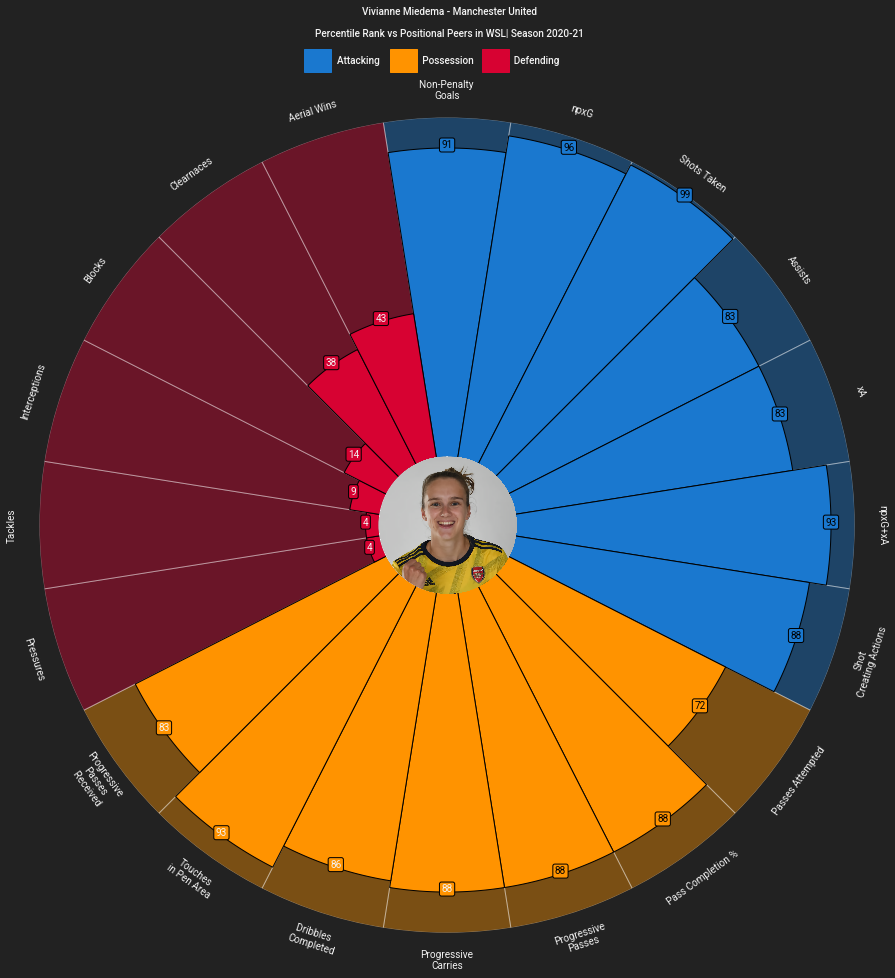

In [85]:
params = ["Non-Penalty \nGoals",
          "npxG",
          "Shots Taken",
          "Assists",
          "xA",
          "npxG+xA",
          "\nShot\n Creating Actions",
          "Passes Attempted",
          "Pass Completion %",
          "Progressive\nPasses",
          "Progressive\nCarries",
          "Dribbles \nCompleted",
          "Touches\nin Pen Area",
          "Progressive\nPasses\n Received",
          "Pressures",
          "Tackles",
          "Interceptions",
          "Blocks",
          "Clearnaces",
          "Aerial Wins"]

values = [91,96,99,83,83,93,88,72,88,88,88,86,93,83,4,4,9,14,38,43]

slice_colors = ["#1A78CF"] * 7 + ["#FF9300"] * 7 + ["#D70232"] * 6
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 10

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)


fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(15,15),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

fig.text(
    0.515, 0.975, "Vivianne Miedema - Manchester United", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

fig.text(
    0.515, 0.955,
    "Percentile Rank vs Positional Peers in WSL| Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)


# add text
fig.text(
0.35, 0.93, "                          Attacking                 Possession                Defending", size=10,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.38, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.46, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.545, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.439, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

In [10]:
df=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\WSL per 90.csv',encoding="latin1")

In [11]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [12]:
params = ["Gls/90",
          "Ast/90",
          "G+A/90",
          "xG/90",
          "xA/90",
          "xG+xA/90",
          "npxG/90"]

# The lower and upper boundaries for the statistics
low =  [0,0,0,0,0,0,0]
high = [1.25,0.68,1.76,1.05,0.46,1.33,1.05] 

In [13]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*7,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [14]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [15]:
viv_values =  [0.87,0.24,1.11,0.85,0.21,1.06,0.85]

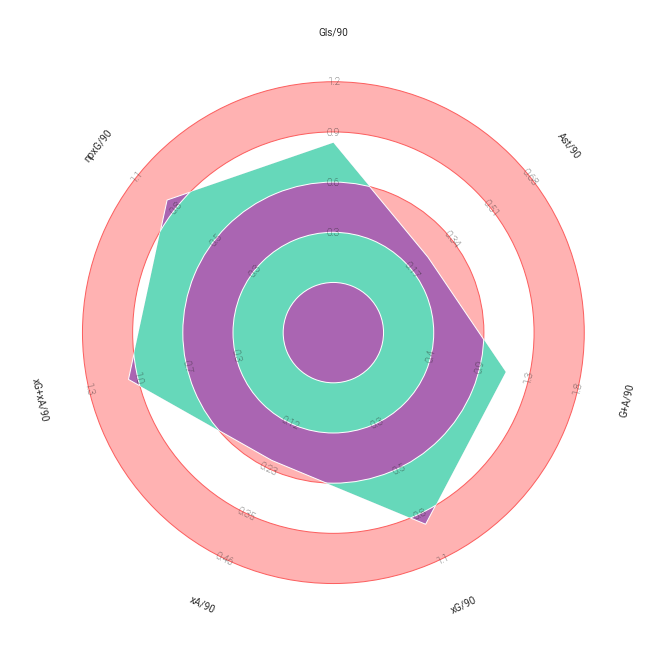

In [17]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(viv_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

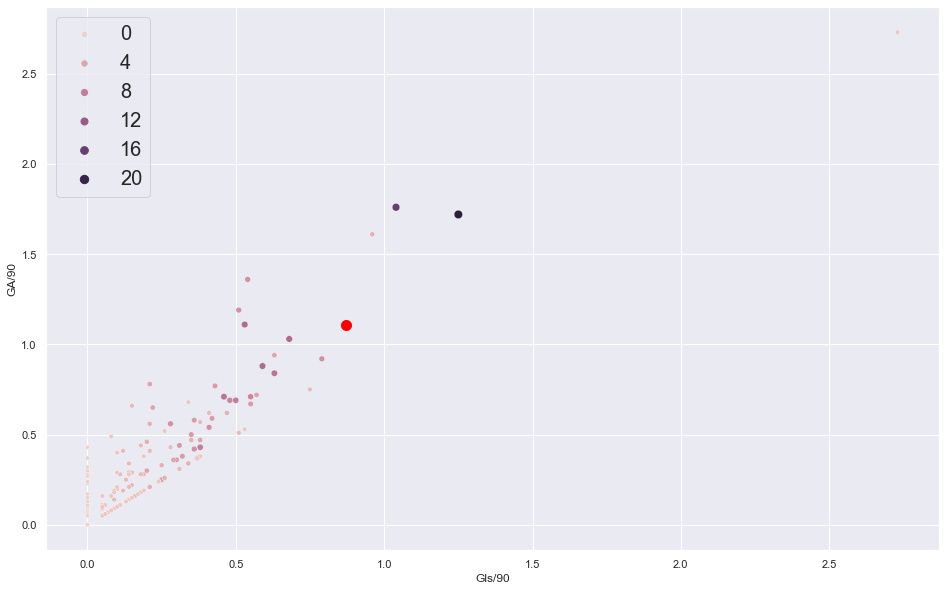

In [20]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Gls/90", y="GA/90", hue="Gls", size="Gls",s=70)
g.legend(prop={'size': 20})

#g.ax_scatter.scatter(0.38,0.47, color = 'red')
plt.scatter(0.87,1.11, color="red",s=100)
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.Gls/90, row.GA/90, row.Player) # xloc of text, yloc of text, text

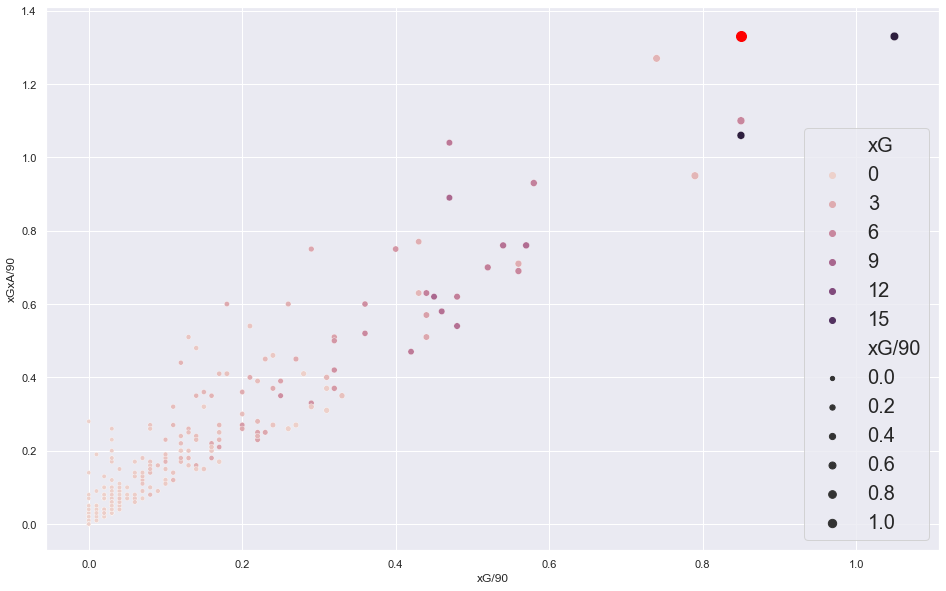

In [21]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="xG/90", y="xGxA/90", hue="xG", size="xG/90")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
plt.scatter(0.85,1.33, color="red",s=100)


In [22]:
    from mplsoccer.pitch import Pitch
    from matplotlib.colors import ListedColormap

    from mplsoccer import VerticalPitch, Pitch
    from mplsoccer.cm import create_transparent_cmap
    from mplsoccer.scatterutils import arrowhead_marker
    from mplsoccer.statsbomb import read_event, EVENT_SLUG
    from mplsoccer.utils import FontManager
    text_color = 'w'

In [23]:
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

In [163]:
df1=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\Viv Shotmaps.csv',encoding="latin1")

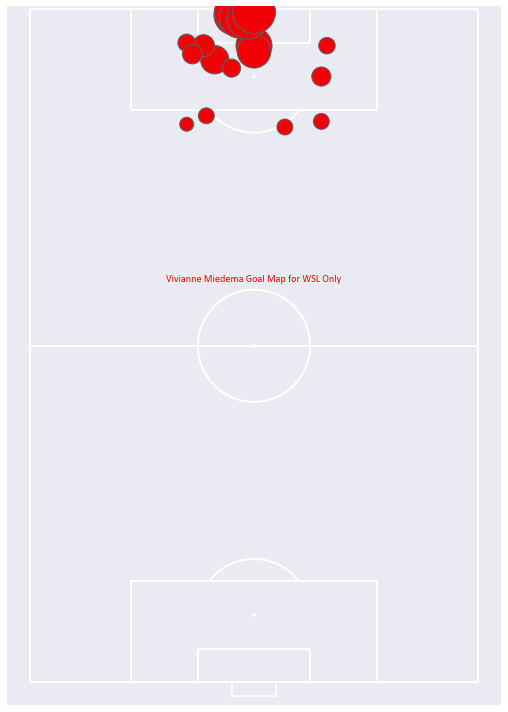

In [167]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1900) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='#EF0107',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Vivianne Miedema Goal Map for WSL Only',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')




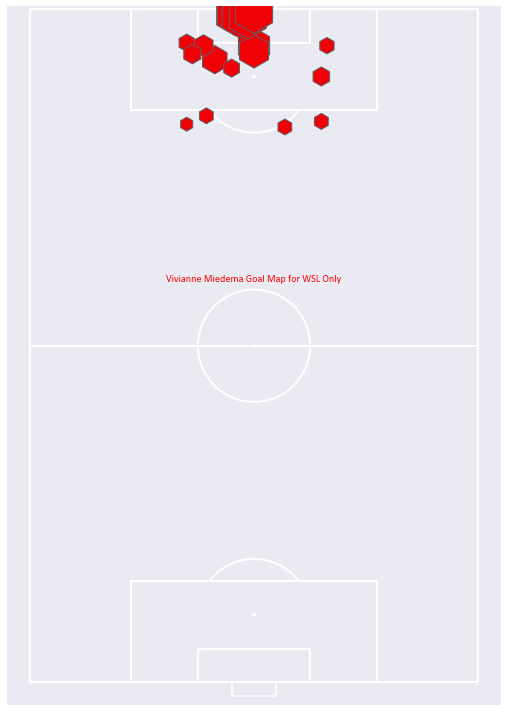

In [168]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1900) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='#EF0107',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='h',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Vivianne Miedema Goal Map for WSL Only',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')




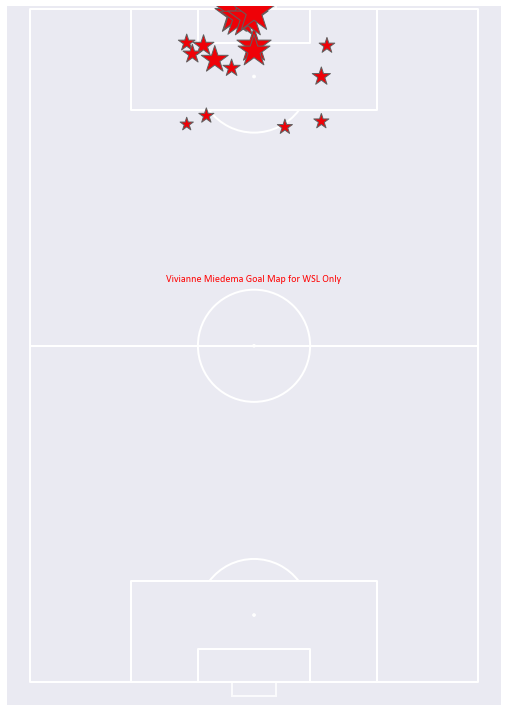

In [169]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1900) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='#EF0107',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='*',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Vivianne Miedema Goal Map for WSL Only',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')




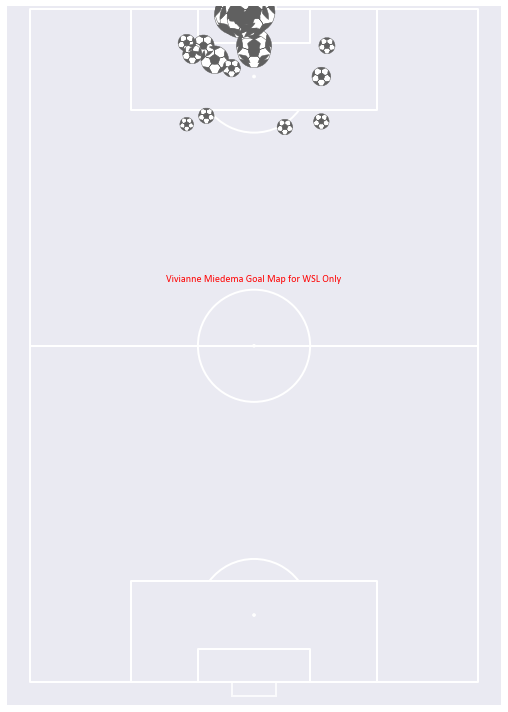

In [172]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1900) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='white',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='football',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Vivianne Miedema Goal Map for WSL Only',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')


